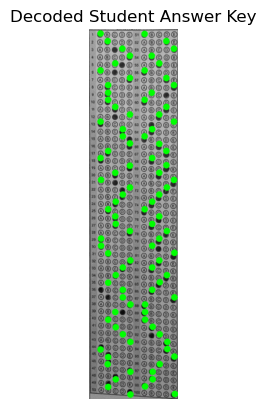

In [2]:
import base64
import cv2
import numpy as np
import matplotlib.pyplot as plt

base64_string = "iVBORw0KGgoAAAANSUhEUgAAALwAAAMNCAIAAACtVYmxAAAgAElEQVR4AYzBeXCV150g7N/vnPMud79X+4KEJBACxC5WGbMLEGYzDnbi2I7tOO5x0qmunsx01aTnj3R/PTNVXdXTqbiTTuLEmU46yzh0DAGzgzBIICTQBhKSQAta0a57dZd3Ocv31a1K1VeVSornwc8++0zXdUKIbduO4xBCGGOGYei6rpRKJBJCCACglHq9XgCQaYhIKU2lUgBgGAbnnBBCKVVKAQAiCiEAwHVdTFNKSSkZY1JK13U1TWOMAYDjOIgo0hhjrusyxgzDSCaTlFJd1xljhBDLsjRNS6VS4+PjV65cSSQSmzZt2rx5s5Syo6OjpaVl586deXl5ExMT9+/ff+mllwzDmJqa+s1vfrN///68vLy6urpkMnn8+HGPxzMwMNDW1lZdXZ2VlTU0NNTT01NWVlZeXj44OHjlyhUA0HWdMbZ58+aVK1cODAx0dXUtW7Zs0aJFo6Ojvb295Wn9/f2PHj1asmSJz+fr7e0tKChYvXq1UgoApJRKKUQkhEgpAUBKSQjhnDuOo2ka51xKqZTSdV0IAQCMMc6567qMMdM0GWNSSgAgaUopIQQhBACEEIQQRHRdl3OuaZplWVJKxpgQwufz8TQppa7rruv6fD4ASCQSk5OTBQUFiMg5l1I6jsMYI4QAgOM4tm1TSgHAcRyv14uIyWRSCBGPx6WUWVlZVhrnPBQKTU9P41/8xV9MTU2ZpimEyM/Pj0ajHo/HsixN08LhcE5OztOnTwsLC2dnZ23bVkrl5uYi4sjIiOu6fr/fNE0AME0TEW3bVkp5vV7Hcfx+v23biUTCMAzLsqSUAFBUVBQMBpVSiURifn4eERcvXgwAyWSSc04pNQzDdV3LsoLBICHk2bNnJSUljuNomjY/P08pXVhYCAQCsVhMSvn48eMNGza4rhuLxUzTJIRkZWVxzuPxeDAYVEo9e/ZM13W/3z85OUkIWbp0aSqVikajgUBASskYU0rNz89zzhljTpqu6wAQj8eDwWBRUdH4+HgymczKyiKETE9Pz8/P5+TkhEIhx3GEEEopKeXCwgJjzDRNpVQoFPJ4PIj49OnTZ8+e+f3+7Oxsj8dj27ZSyrKsWCymaVpGRoamaalUKh6P22mu61qWpWmaz+ejlE5PT9u2DWlCCE3TpJQLCwuGYQCAUsp1Xdu2k8mkrutKKQDgaVJKSqmUkjEWCAQmJydt22ZphJBEIqGU8ng8yWTScRxKKSIqpQghiEgplVJSSjnnUkqllBCCUmqapm3bQggpJUnD7du3+3w+RPT5fMlkcmFhAREZY5RSpZQQghACabquu64rhFBpUkohBGOMECKEqL9V/+KOFwFACCGlJISwNJlm2zalFAAopYjoui4hhFIqpbQsyzCMUChkWZaThoi6rruuCwBSSkKIUsrn8y0sLASDQUJIMpkEACklpVRKSQhxXdfv9zuOg4hSSkRUShFCLMsihHi9Xtu2VZpt27qum6aZTCaVUoQQj8dDKeWcIyLnXAjhpgUCAcMwAMBxHCmlpmmO41iWxRhDREqplJJzTv6AMWbbtlKKc46IpmkSQkQaAEgpKaW6rgshEBEApJS6rmuaxjlHRCkl55wQwhhDREqplBIRdV1XSkkphRBKKU3TXNcFAEIIpRQRAcAwDMaYYRiO4yilGGOmaXLOCSGBQCAejycSiYyMDF3X4/G4Usrn8yGiruuaphFCLMvKzMwcGxszDAMRHcfJzc1ljEkpXdcNBoO6rqdSKcuyFi1adPXqVXz99dePHz+eSqUcxyFpHo9HKeW6Ludc13VCiOu6pmkyxgghAMA5d12Xcw4Ab735FvyRs+fOapo2OjpKKQ0EAkIIy7I0TXNd1+PxRKNRzrmU0uPxaJpGCOGcp1Ip13URMTs7e3BwMBAI2LaNiCTNcRylFGPMNM14PA4ASikACAaDhBDXdRFRKZVMJh3HiUQijuNIKSmljuMIIZLJJABQShGRc26aZiqVUkoZhqHrumVZhmEwxjRNI4SoNNd1HcdxXZcQYpomY8y2bU3TpJQAIKUEAE3TpJRKKUopIUQphYimaTLGhBDRaBQR//Nf/+d//+W/ezwey7KSySRjDBEppZqmGYahlLIsi1IKAJRSpRTn3HEczjkABINBn88HAEopKaWmaZxz27allEIISqlSilKq6zoAcM4BwDRNQohMI4RIKQHAdV2lFCIqpRhjjuMwxgCAc+7xeCilhBDXdRljACCEcBxHpjmOAwCEEJYmhAgEAh0dHfj2228fO3Zsfn6eMaaUIoQopWzbRkRCiGVZPp/P4/EIIXRd9/l8iOi6LuccEY8eOQp/wsVLFwkhQgjGGCGEcy6ldF0XAFzXZYwZhkEpZYyJNEIIYwzTXNeVUmqappQCANd1fT6fZVmYZtu2ruuQppSSaR6PJ5VK2bYtpWSMGYYBAIQQIQRjjFIKAFJKRBRCSCkBQNM0pZSUklKqlLJtGwCEEJRS13VTqZQQQkqplOKcE0IwjRCCiACglBJCUEo1TTPTAEBKiYhCiEO1h+CPXLp8SSnFGBNC2LatlGKMAYDrupxzQggiuq6LiCyNECKlVEphGgBwzoUQuq77fD7HcTjnQgjXdZVSlFJEpJQCgJQSEQHAdV2ShohSSqUUAAghOOeIaBgGIYQxRgiRUiqlCCGI6LquUsq2bc65ruuUUk3TAIAxBgBNTU3413/911u2bLEsS0pJCPF4PEopALBtW9d1x3EAwHVdQkgwGDRNEwCUUpTSQ7WH4M/67PxnmqZJKRFRSum6biqVsm17YmLC4/Hk5ub6/X5d1wEAEV3XZYwRQgCAMRaNRhFRKeU4jpRS13XOud/v52mapimlpJS6rjPGHMex0wDAtm1N07xeLyEEAKSUpmkCgJSSEEIpdV1XCGFZlmmaQgjbtgkhHo8HEW3bppQKISilqTQ9zXEcIQSlFNOUUo7jKKUAgHNuGIbf79c0DQCklIh4+KXD8Cf8/uzvNU2jlEopVRohBADiaUIIXdellJTScDislHIchxBCKUVESqmUEgBisdj4+HgsFkskEsuWLQumAYBME0JomqaUIoQgYjKZjEaj/f39z549S6VSpmmWl5dXVFQwxoQQhBBN0wAAEV3XRcRkMtna2jo+Pu667tjYWCgUyszM3LZtW3Z2tq7rjLGGhgb8whe+8MorryCibdsAQCmFNEKIEAIAEFEIQSn1eDymaRJClFKHag/Bczh/4byUUtO0WCz25MmTzs7OeDw+Pz8PAFLKffv2VVZWmqZJCNE0DREdxwkGg6lUampq6t69e319falUamFhgTG2devWysrKjIwM27a9Xq8QglIKAIjoOE5fX9/9+/dnZmYQ0UjbsGHDypUrPR4PpEkpXddljAFALBbr6enp7+8fHx+3bTszM3Pp0qUVFRXZ2dlCCEIIAFiWlUqlCCGMMSGElJIQAgCEECGE67q6ros0AGCMeb1eSqmu67UHa+HPunjpIudcSskYQ0TbtltbW2/dumXbtlKKEGKaZmlp6caNGwsLC5VSAKCUopRqmuY4zoMHDxoaGmZmZnRdBwAhRH5+fnV1dUlJCSJSSnVd55wDgFIqlUp1dHQ0NDQIIbxeLyEkmUxyzouKirZt21ZSUqKU0nUdAJRSuq5Ho9ELFy4MDw/rul5UVOS6bjAYvHfvHiIeOXJk6dKlgUDg1q1b+JWvfOXll18WQiSTSc65UgoRGWO6rgshHMdBRCklAPh8Pr/fDwCc86NHjsJzuHL1ihBicnLyzp07o6OjkUikvLxcKcU5708rLy8/dOhQMBiklCaTSV3XASCRSPz85z9PpVJ5eXm5ubler9eyrN7e3mQyuX///srKSgAQQgCAYRhSyq6urosXLwaDwczMzJycnGQyOTQ0NDU1VVZW9sorrxBClFKIKIQghMTj8Xv37rW0tGRnZy9atMgwjMnJyZ6eHkLI5s2bq6urCSGu66bSlFKMMcMwlFKWZSmlNE2TUiqlhBCEEADQNM3v93s8HkQ8sP8APIfLVy6LtHg8fvv27e7u7tLS0sWLF4dCobm5uaGhoWfPnmVlZW3fvr2wsFAp5aYRQjo6Om7dupWZmbl27dqcnBxCSCKRePz4cXd3d1FR0f79+71erxCCpnHO79+/f/Xq1by8vPXr1+fm5mqaJoQYHR198OCBEKK2trawsBAApJSMsfn5+d/+9reTk5Pbt2/Pz8/PyMhQSgkhUqnU9PT0xYsXjx8/vmrVqvv37+MX02zbtiyLEIKIqVRqdnY2JyeHMSaEoJS6rqtpmifNcZzOzs7//rf/HZ7D1WtXbds+d+5cf3//2rVrKyoqdF33+Xy2beu63tPTc+7cuY0bN+7bt8/r9bquaxhGLBZraWl58OBBeXn52rVraRpLq6ura21tfemll9asWSOEoGltbW3Xr19fsmTJ+vXrCSG6rlNKOedDQ0MXL15cuXLlsWPHGGMAoJRKJpPt7e137txZs2bNkiVLPB6PlFIphYgPHz5sa2urqqqqrq7mnFtpUkpd14UQjuMopQCAMSalRESlFKWUMYaIpmn6fD4AOFR7CJ7DhYsXhBBzc3M3b96cnZ3dvHlzXl6elFLTNMMwlFJzc3Pt7e2u6x48eDAUCiWTSUTs6Oi4evVqSUnJhg0bsrOzAYBzjmldXV2NjY2rVq2qra3lnAMAY+zJkyenTp3KycnZs2dPNBoVQmRmZhqG4fF4ZmZmPvvsM0rpW2+9FQwGXdeVUjY1Nd28eXP37t0rVqzo6+ubm5sLh8PxeHzdunUA8NFHH8Xj8W9+85tPnjzBL33pSydPnnRd17ZtKaVpmuPj483NzatWrSopKXEcR6UhYiAQCAaDUsqDBw7Cc/s///Z/zp49u2LFitWrV3d2dj558iQrKyscDi9dujQzM7O1tfXSpUtf+cpXiouLhRCmaT569OjXv/71V7/61czMzPHx8eHhYTdty5YtnPPPPvtsZmbmm9/8pq7rUspkMvmLX/yCUvraa69NT0+PjY05jhMMBrPTHjx4cPny5Zqamu3bt6u0hw8fXrp0qaysbPv27ePj46lUyrZtKWV+fn44HG5ubh4ZGTly5Eh2dnY0GnUcRylFKR0cHHz48KFhGIWFhSUlJclkMhqNBoPBzMxMpRQhxJs2ODj49Q++Ds/h/IXzSqn29vabN29WVlZu2bKlra1tcHDQ4/EEg8GlS5cWFRX19PTcv39//fr1GzdutCzLcZyWlpaHDx/u3bs3Eol0d3cPDw/HYjFd19etW7do0aK2trbx8fGjR48Gg0HXdVOpVEtLS09Pz4kTJ+Lx+LVr1zjnlFJEXLVq1ZYtW3p7e8+ePbtly5Zdu3bZth2Px8+cOZOXl7d27VoA+Oijj5YuXZqbmyulXLVqVX5+fn9//09/+tPjx48DAL7++utf+MIXEokEpVTX9VQq1d7e3tTUVFVVtX37dsuybNtmjAGApmmRSMS27Rs3bvzz//5neA5Xr139/zx8+PDEiRMlJSX/9E//5Pf7S0tLBwcHs7Kydu3a5fV6//7v/76mpmbPnj1SSkLIT3/601gs9v7778disRs3bni9XsZYd3f3tm3bNmzYMDs7+9FHH73//vs5OTmIODIy8vOf//zkyZOLFi1qa2t78uTJkiVLnj59KqU8evTowsLCxYsXg8HgiRMnhBCpVOru3btDQ0Mvv/zy/Px8U1MTY6yoqEhKmZOTU1RU1NfXd/PmzdWrV2/btm12dtayLEopALS3t/f09OTn5xcWFmZlZfX29nZ0dJSVle3atcu2baVUIK32YC08t/MXztfX14+Pj+/cudPj8dTX18/MzBQUFAwNDRUXF+/cuXNhYeHGjRuU0hMnTgBAf3//rVu3QqHQoUOHhoaGmpubNU0rKCiYnp7mnO/bt29kZOTzzz9ftmxZTU0NpXRwcPDs2bMej+e1114bHh5ubm7esWOHZVmNjY2pVOqtt94aHh4+e/ZsWVnZoUOHlFITExM/+9nPDh48WFVVNTQ09MMf/nDfvn3FxcVCiMLCwmAwKIT4wQ9+UFFREQqF8OWXX3799ddTqZRhGFJKAJiZmWlqatI0bc+ePUop13UREQA8Hk9GRsbc3NzFixc//unH8BwuXb506tSpsbGxL37xi4sXL/7Hf/zHSCSyfPnyx48f+/3+mpoaTdN+97vfxWKx9957TyllGMZHH30EAG+88cbg4OC1a9dOnjyp63oikZibm1u5cmUikfjud7974sSJVatWWZbV19d36tSpb3/721LKtra2+fn5TZs2TUxM1NXVHTp0KCcnp62t7d69ex988IFSanJy8vLly4j4xhtv9Pf3NzQ0RCKRJUuWGIaRmZkZiUSePXt27do1r9e7b9++hYUFzrmu65zzlpaWwcHB0tLSnJycQCAwMDDQ2tpaUVGxa9euRCJBKQ2FQj6fr76+/u//7u/hOVy+ctlxnGvXrtm2fejQoVgsVldXNz8/v2zZspGRkcLCwurqaiHElStXFhYW3njjDUppZ2dnQ0NDeXn5Cy+80JS2Z8+e0tJSzrlSyjTN0dHRurq6/Pz8w4cPE0IGBwdPnTpVUlJy9OjR3t7e+/fvv/zyy0qp5ubmnp6e9957b3x8/NKlS16v98SJE0qpycnJX/7yl6+//npJScnExMSHH35YUFCQmZmplDpw4EAgEJBS/uhHP9I0bePGjXjixImTJ08KIRBRKUUpdRynra0tGo3u3r2bUuq6rhACEU3TDIfDsVjs4sWLP/v4Z/Ac6m7U/fKXv5yYmHj11VcLCwv/9V//lXO+aNGikZGR4uLiffv26br+u9/9bmJi4t133zVNkxDyL//yL5FI5PXXX+/v76+rq/vyl79sWRbn3DTNcDg8Nzf34Ycfbt26dd++fZZlDQ4O/upXv/qbv/kbv99/+/btubm5PXv2TExMnDt3bt26devXr+/u7m5sbPzqV79KCHFdt6GhYXR09J133unv779x44ZSKhKJ6LpeVlZWUVExPT195syZYDB44sSJubk5zjljzHXdnp6esbGxhYUFANi6datpmk1NTX6/f9euXalUSikVCoUCgcCNGzf+xz/8D3gOl69cRsQrV67Mzc299NJLnPNr16719PRkZWVNTU2tWLFi//79lNJLly6Nj4+//vrrfr+/p6envr5+xYoV27Zta2xs7OrqOnjwYE5OztzcHKU0EAiMj4/fvn07EokcPnxYCDE4OHjp0qWCgoKDBw/29fXdv3+/trbWMIyOjo62trZ33313fHz87Nmzixcv3r9/v+u6c3Nzv/jFL44ePbpixYqJiYkf//jHVVVVmZmZfr+/uLjY7/dzzn/84x8vX748KysLjx079uUvf9l1Xc45ADDGXNft7OycnZ3du3cvAHDOlVJSSp/P5/V6hRCXL1++detWR3sH/FmXr1xmjDU2Nt69e/fIkSPl5eXf//73MzMzV65cOTEx0djY+LWvfc3n833yySd5eXl79uxxXdfn8/3kJz+JxWJ/9Vd/1dvbe/r06ZMnTzLGxsbGXNetqqqamZn5zW9+U1NTs2bNGtd1o9HoT37yk/feey8cDre3t8/MzGzbtm1oaKi5uXnv3r3hcPjBgwft7e3vv/8+pN27d6+np+fLX/7y+Ph4Q0NDRkbGsmXLOOder7ewsHBoaOjixYuRSOTAgQOpVMpxHKWUbduzs7MAkEqlZmZmFi9eHAqFmpubvV7vtm3bbNumlEYiEV3X6+vr/+H/+Qd4DpcuXwKAq1evPnv2rLa21uPx3Lx5c35+vqKiorOz0+Px7N69O5lMfv7554ZhHD9+nFI6PDzc0NAQCoX27t374MGD9vb2ysrKSCTS1tZmmub+/fsfPXp0586dqqqqbdu2KaWePXt28eJFxtixY8eePn3a2tq6du1a0zSHhoZisdjRo0cHBgbOnz9fVVW1fft2IcT4+PhPfvKTysrKl156aW5u7kc/+lFVVVU4HPb5fLm5uXl5edFo9Lvf/W5NTY3P58PDhw+/++67lmUBgG3bmqZRSp89ezY2NlZVVaWUklJCmqZpfr/fMIz6+vrPPvtMSnmv+R78CR//7OOCggJKaSwW+8EPfvDCCy9s3rz5ypUrqVQqNzfXtu3Jycna2tpEInHq1Kndu3dXVVU5jgMAly5dampqev/998Ph8MWLFwcHB8PhMGOspKRkw4YNHR0d9fX1H3zwga7riBiPx3/xi19s2LBhzZo13d3dQ0NDBQUF0WiUc75jx46ZmZlbt26Zpnny5ElEBIDOzs7bt2/X1taaptnS0pJMJkOhkOM4RUVFS5Ys6e3tvX///saNG5cuXRqPx13XZYylUqmHDx+OjIwEAoFwOFxeXk4I6ezs9Hq9a9eutSxL07RwOGwYxsDAwNWrV0/99hT8WecvnPd4PEqpurq6xsbGXbt2FRUVNTY2Tk5OZmVl2bZdUFCwdu3aoaGhpqam5cuXV1dXCyEsy2pqahodHd27d6/X6+3u7n748GE8HkfEysrK1atX37t3b3h4+NixY3l5eUqpRCLR1NQ0MjKyc+dOznlPT8/c3BwihkKhzZs3G4bR1NQ0NDT0xhtvUEqFELFY7OLFiwsLC/v37/f5fK2trclkUktblFZXV9fX13fy5Mnp6Wk8fvz4q6++yhhzHAcAOOeGYRBCLMvSNI0QopSybRsRPR6Pz+fTNG14ePjzzz8fGxuLx+ONdxrhj3zn776zZs2aQCDAOaeUfvrpp6Ojo7t379Z1PRaLcc79fn84HBZC3LhxIxaLvfbaa/n5+YiYTCZt2/7+97+fnZ196NAhxlhTU1MqlfJ6vZs2bZqYmLh69arf73/99ddN01RKCSHq6+t7e3v379+PiI8ePTJN0+fzLVq0SCnV1tY2MDCwd+/eyspKAEDE4eHhixcv+ny+HTt2TExMTE5OIqJSKiMjIxKJtLW1WZa1b9++SCQyOztrWZbP52OMjYyM9Pb2ImJpaWl+fj4iTk9PI2JmZqbrupqmBQIB0zTn5uY+//zzJ0+eXL1yFf6E7//g+xUVFUopROzv76+rq/N4POvXr3ccJxaLIaKu6+FwWNf1lpaWmZmZXbt2lZaWSimFED09PdevX8/Nzd26dWsgEEilUvPz85qmAcDo6GhnZ2dFRcW+ffuUUlJKIcTQ0FBdXZ1hGFVVVaFQiDHGOTcMAwBaWloePXq0devW9evXM8Yg7dmzZ+fOnWOMbdmyRU/z+XyO44yMjExNTT18+LC8vPyll15qbW3FY8eOnTx5klJqWRYhBBGVUgCAiIwx13VVGiJ6vV7DMBhjlNKRkZG7d+8ODAwopTweD6X0zOkzJ1896ThOaWnptm3bAoEAIYQxJoSYn58/c+ZMMpnctGlTJBKRUjLGAKC5uXl6enrv3r1lZWWGYTiOo+s6ANy5c6euri4vL2/nzp2IyDmnlC4sLDQ2NjLGqqurV65cyTlHRMbYxMTEuXPnhBDV1dWRSIQxJoRIJpN9fX0DAwOVlZVbt241DEMpJaVMJpPt7e0dHR2LFy8uLy/XdR0RHcdJpVL9/f2jo6Pr1q1buXIlISQWi3HOSRqlVEqplKKUKqUopYgIAEII27Y1TfOlGYbR3t5eV1c3Ozt76+Yt+CPf+bvvrFu3zuPxEEIQkRDy+PHj69evM8aWL18eCAQIIQAQj8f7+/tt2968efOSJUsopVJKpZTjOPfv329oaCgsLKysrPR6vYZhJJPJx48fj4yMlJSUbN68ORKJSCmFEEopznlPT099fb1pmqtWrQqFQojouu7Tp08HBgZKS0v3799PKQUARCSEcM57e3vb2tqi0WhBQUEgEDBNMxqNjo+PG4YRCAT27t0bDAbr6+tx165df/mXf8k5tyyLEKKUchxHKYWImqYBACJKKQkhPp9P13Uppa7riDg4ONja2joxMUEIEUJQSj0eT0FBQWVlZUFBgVJKSomIAEApnZiYuH79ejQaDQQCyWQSADjnmqZt3ry5srKSUmrbNiJ6PB5EFEL09fX9/ve/R8ScnBwppVIqGo1mZ2evW7euoqJCSum6rmEYUkpN04aGhs6dO+c4TiQSAQCllG3blNK1a9dWVlZqmsYYU0pJKRljiUSiq6urtbXVtu2MjAxEdF2Xcy6lXLVq1ebNmwEgkUhMT08LIUzTREQhBAAQQnRdBwAhhEwDAKUUIno8Hq/XaxiGUqqvr6+xsXFkZAQRdV2/cP7CkaNHAoHA8uXLV6xY4fV6AYBSimkA0N3d3dTUFIvFTNMkhKRSKdu2i4uLq6qq8vLyDMMAACEEIjLGHMe5d+/e3bt3CSFKKSEEISQQCJSUlFRUVOTm5iqlpJQAgIgAkEql+vr6BgcHJycnbdtGREqp3+9fvnx5ZWWlruuI6LquEMI0TUqp4zjxeLyjo2NkZCSRSGBaXl7exo0bMzMzCSEAcPv2bdy/f//bb7+NiJxzAEBE+QeIqGkaIkopEdHn8+m6rpTCNMZYPB4fGxubmZmxbdvr9WZnZ3s8nqysLE3TXNcVQlBKVRpjbGpqSko5NTX19OnTD7/34bf/9ttFRUX5+fkej0cp5TiOruuIaBiGbduI2NramkwmJyYmXNdFxPz8/KKiotLSUgAQQjiOo2kaIgIApXRqampgYMCyrP7+fr/fn5+fv2jRotzcXMYYAFBKCSFCCEIIY0wIMTw83NHRkUwmXdcVQpSVla1cudLn8yEiACTShBAAoGmaUspxHEqppmlSSgBARM45/IHf7/d4PIwxSqlSamZmZnBwcHx8fGFhQdf1rKys4uLi3NxcXddlGvn/4ZxPTk4ODg7OzMwIIQghhYWFJSUloVCIUiqlVEoBACISQiilCwsLo6Oj8Xg8FovZth2JRAoKCoLBoGEYhBAAkGlKKUIIAHDOHcdJJpPvvvPu//xf/1PTtMzMzHA4rGmaTHNdlxBCKSWEICIhJMlxPtYAACAASURBVJlMAoDjOIlEghASCoV8Ph8iAoBt201NTbh///4vfelLjDEhBAAgohCCEIKIAMAYAwAppRAiGAz6fD4pJSIKIQCAMSaEIITQNABQSiGiUsqyLJUmhNA0jRDCOT9y+Aj8kbPnzlJKpZSaprmuaxiG67qEEKUUIQQAhBBSSi1NpgGASNM0jVKKiAsLC5RSRNQ0TQjBOdc0Tdd1IYRKo5QCAKUUAKSUQgjXdTnniKjrummanHMhBABwzi3Lsm1bpgGAUopzDgCMMaUUABBCEBEAOOeMsUAgYJompVQphWkAgIiEEKWUbduWZVFKdV0HACEEpgEAYwwAOOdKKUKIUkpKiYhKKUSklEKaSkNESqlSSgjhplFKdV1XSnHOGWOIqP4AABhjUsrDLx2GP/Lp6U+VUogohHBd1zAMSqlSStd1AEgmk5qmAYBSilKKiEopKSUhBAAaGhpwz549b775plIKEQ3DUEpZlqVpGiHEcRxEZIwBgFLK6/V6PB6lFKWUpCmlOOdCCCklIYSmMcZEGgDYti2lNAxD1/WafTXwJ5y/cF5KyRhTShFCEFEIoZRyXRcAOOeGYRBClFKMMUKIEEIpxTlnjGmappSKxWKc80AgYBgG51wIgX9AKVVKCSGklABAKWWMSSkdx+Gc67oOaUopxhghxHVd27aTyaTjOEopABBphBBN0xBRSimEIGmcc8ZYOBw2TVOlUUoJIUIITLNtWylFCFFKIaJSChGVUgCAiIQQAFBpQgillBCCEIKI5A8opVJKkcYYI4QIIRzHkVICACIyxlSapmmIKKUEACklABw7egz+hN99+jsAkFISQpRSlFIAIIQgokzjnCMiIQQAKKVCCAAghNy9exdramreeecdx3FM0+ScCyGklJgGAEopTKOUaprm8XgopQCAiACQSCRmZ2dTqRQhxHXdYDAYiURM0xRCUEoJIa7rSikJIUePHIU/6+KliyqNpimlbNuen5+XUlqWpWladna2pmmmaQohpJQ8jaYBQDweX1hY0HWdc66UMgxD13WPxwNpUkpMo5SKNNd1LcviaYQQv99vmiYhBBGFELZtJ5NJ13XhDwghlFKllJRSCIGImqa5riuEMAzDNE2Px4OISilCiOM48XgcADjnQgiPx2MYBiEEEQkhkIZpJM113YWFhUQigYiapjHGDMMwTZNSKtMIITINAAghlmXFYjEhhGVZSqmcnBy/3y+lxDQhhJQSEY8fOw5/1ukzpwGAECKlREQA4JzbafPz87FYjBDiOE4kEgmHw16vV9d1ALhz5w4eP3781VdflVJqmmbbtlJKCIGIAICIAICIAEAI0XXd4/EwxgDAdd3JycnBwcGRkRHLsnRdd103Ozs7Pz+/pKTE7/fTNCGElPLI4SPwHC5cvEAIQUQp5eTk5LNnzx49ekQp5Zz7/f6ysrJgMJiTk+P1eoUQAEAIEUIAgGVZU1NTAwMDiUQiFosJIQoKCnJycoqKijIzM+UfUEoJIVLKaDQ6Pj4+NzcXjUY556Zper3evDRN0xDRcZxkMplIJBCRUgoAiEgIAQDGmBBCKaVpGk/Tdd3v95umqZRyXXdhYeHZs2cDAwPRaFSkhcPh0tLSRYsWBYNBRJRSKqU0TWOMua4bi8XGxsb6+/unpqYQ0TCMQCCwePHipUuX+nw+zrlSilKqlOKcK6Wmp6e7urrGxsaEEK7rUkrz8vIqKiry8/N1XSeEUEoB4OCBg/Acfn/295RSzjljzLbtZDI5MjLS09OTSqWcNNu2TdMsKChYt25dTk4OANTV1eErr7xy4sQJKSUhhHMupXQcRynF0iiliMg5V0r5/X6Px0MIUUoNDQ01NjZGo9GioqJQKAQAruumUqnx8fEVK1YsX748FAoppSilAFB7sBaew6XLl4QQlNLZ2dmGhoapqSmv1+v3+w3DSCQSExMT4XC4oqJi+fLlPp9PKUUp5ZwnEomnT58+efJkfHzc5/OZpomI0Wg0lUqVlpZu3749EokopQAAEQkh8Xi8ra2ttbVVKeX1enVdd113fn4+EAhs3LixtLTUNE3HcZLJpOu6UkoAQERN0xDRcRxEpJQCACIKITjnmqYFAgHDMJRSjuN0dXW1trYKIbKyskKhkGVZo6OjjuMsW7Zs7dq1mZmZiCilRETG2MzMzJ07dwYHB71eb0ZGht/vT6VSExMTyWRy9erVmzZtMk2TEIJplmX19/e3trYmk8lIJBIOh71ebywWm5iYsG17yZIl69atCwaDSinG2KHaQ/Aczl84L9IQcWFhobu7u7OzMyMjw+/3Z2dnM8aSyWQqlRoYGBBC7N27t7Cw8OzZs3jo0KE333xTpAFAPB6fmpqybTsUChUWFlJKhRBSSqWUz+fzer2EkOnp6Vu3bs3Pz1dWVpaVlSEi59zn83k8nnv37nV2dq5du3blypWapjHGCCEH9h+A53D5ymXbtgGgrq7u4cOHq1evLi0tpZRKKR3HIYSMjIz09PRsTgMAxhjnfGBg4ObNm7quL1++PBgM+v1+Qkgqlert7R0cHMzPz6+pqfH5fFJKpZRt2x0dHS0tLXl5eTk5OZFIRNM0x3GePXv26NEjx3F27NixfPlyKaVlWUII+AMppeu6nHNCCKQxxgBACKFpms/n83g8rus+efKkra2NELJhw4bS0lLGGABMT083NzcPDw8vWbJk/fr1oVBIKUUp5Zw3NTV1d3cXFhYuWrTI5/OZpomIQoju7u6HDx+WlJTs2LEjKytLCCGlHBgYuHv3LmNs3bp1Xq+Xcw4ApmkiYnt7++Dg4Pr169euXcsYQ8SXDr0Ez+H/fvJ/PR6PlNK27fb29gcPHmRmZpaXly8sLDiOAwBCiOXLlyeTydu3b2dlZe3fv7+pqQn379//9ttvSykBgHM+MjLS2toKAH6//8UXXwwEAlJKIYRSyufzeTweKeWdO3c6OztXr169atUqSumDBw9isdiqVasKCgqklBcuXJiZmamtrQ2FQrquHzxwEJ7blatXRkdHf/7zn69cuXL37t0DAwPj4+OMMdu2V61aFQ6HL126NDU19c477+i6TghxHOfGjRtDQ0MvvPCCYRiDg4MejyeZTBYWFhYXF7e3tz948KC6unr9+vVSSgAYGRn5/PPPw+Hwpk2b+vr6RkdHNU0zTbOsrIwQUldXBwD79u3Lzc1NpVJSSs55PB6fn59PJpOU0lAoJISIxWJCiMzMzEgkIqXUdT0QCHi93uHh4evXryPizp07i4uL5+fnR0ZGAoFAXl6e67qNjY1dXV3V1dXr1q2TUjLGnjx5Ul9fn5mZWVpa+vTpUyFEKBSSUpaUlGiadvv27ampqRdeeKGyshIRHcepr68fHh7euHFjQUHB0NDQ4OBgIpHIycmprKxUSt26dYtzfuDAgby8vIMHDsJzO33mNCLOzs6eOXPG5/PV1NRYlvW73/0uHA5zzg3D2L17dyAQGB4ePn/+/CuvvDI0NIR79ux57733CCFSSsdxxsbG+vr6NE2bnZ3dunVrbm6uUkpKqZTyeDzBYNB13VOnTiUSicOHD+fl5Q0MDNy9e3d6enrHjh2VlZWapg0MDJw5c+bw4cPFxcW6ro+MjLz7zrvwHK7XXXddt7m5+cqVK1//+te9Xu8nn3zi8/kWL148NjaWk5Ozfv36/v7+Tz/99MSJExUVFUKIqampU6dOrV+/ftOmTV1dXQ0NDYsXL56YmCCEHD9+HAA+++wzxtgXv/hFRCSEtKRt3bo1FArdvn17ZGQkOzvb6/WuWLFi2bJlfX19N27cWLp0aXV1tWVZnHMp5ejo6IMHDxYWFrxe7+LFi4UQc3NzsVgsNzd39erVlFJN0wKBgNfrbWxsvH379saNG7du3app2v3795ubmxcvXrxly5aMjIyJiYmzZ88WFRXt3bsXABhjDQ0Njx8/3rJli2ma165dsywrJydnYmJizZo127ZtGx8fv3XrVk5OzosvvsgYm5iYqKury8jI2L59++joaGdnZygUCofDU1NTWVlZVVVVLS0t7e3tu3fvXrZsGee89mAtPIfv/N13tm7dallWX1/fp59+unPnzk2bNk1NTf3yl78sLS0Nh8OBQGD58uVerzcWi3300UebNm2ilOKOHTs++OADTdM457ZtJxKJ8fHxmZmZZDJZVVWVkZEh0wDA7/eHw+FkMnn69GlEPHDggN/vv379+sTEBCJmZGRUV1dnZWXFYrHvfe97tbW1K1euNAyjsbHxb7/9t/Ac6m7UWZb161//OhaLfetb35qenv7BD37w/vvvB4PB+bTCwsJoNPrJJ58sW7astrZWCNHf33/mzJm33norFAp1d3cPDg4eOHBgdHT0xo0bq1atWrFixc2bN/v6+t577z3DMJRSjY2NfX19R44csSzr1q1bc3NzZWVlfr9/0aJFhYWFCwsL169fp5Tu2bNHCOE4jlJqaGioq6tLSun3+wsKCkzTTKVSw8PDgUBg9erVpmlKKT0ej9frvXjx4rNnz/bs2bNo0SIpZX19/ePHjyORyMaNG4uLi23bPnPmTCgUqqmp8Xg8ruv+x3/8hxCipqYGAC5duhSLxRYvXjwwMLBy5cpt27bF4/HTp08Hg8GjR4/qut7V1XXz5s2Kiordu3c3NzcPDg5u27YtFAolEglEjEQiAwMD169fr6ys3Lt3r1Jq39598By+9V++VVNTY9t2Z2fnuXPnXnvttfz8/Pn5+V/96ld5eXmhUCgSiVRWVgYCgWQy+fHHH5eWlkYiEXzhhRe+/vWva5omhJBSTk1NdXV1pVKpgoKCiooKwzA450opRAyHw4FAIJlMfvrppx6PZ//+/ZZlXbp0CRENwxgYGDhw4EBlZWUymfzwww8PHjxYXl7u9Xqbmpq+/d++Dc/h6rWrUsp/+7d/45x/8MEHz549++EPf/iNb3zDNM1kMjk1NVVaWhqLxX7/+9/n5OS8/PLLjuM8fvz4/Pnzb7/9djAYfPDgwfDw8OHDhycnJ2/dupWZmVldXX379u2enp4333zT4/EAwM2bN4eGhr7whS/E4/G6urrp6emysjJKaUlJSXFxsW3b165dU0odPHjQcRzOOSGkv7+/r6/PcZxYLLZ8+fLi4uLHjx+Pjo5WVFSUl5crpQghfr/f6/WePXt2YWFh165d+fn5IyMjd+7cmZ+ft2171apVW7Zs0XX99OnThJADBw5kZGTYtv2rX/3KNM3du3e7rnvp0qWpqamCgoKnT5+uWrVqx44dhJDTp097PJ6XXnrJMIz29vaGhobVq1dv37795s2bY2NjL774YiQSmZ2dFULk5eUNDQ3V1dWVlZXV1NQopQ4eOAjP4b/+zX/ds2cP5/zRo0cXLlw4efJkfn7+1NTUv//7v2/evDkSifh8vqysLI/HY1nWj3/84/Ly8nA4jC+88MIHH3yg67rjOK7rdnd3P3jwIDs7u6KiIi8vj1KqlEJESqnf7/f5fJzz8+fPJxKJvXv3Tk9PNzQ0lJSUhEKhxsbGLVu2bNiwYWho6Le//e0rr7yydOlSSunw8PCPfvSjO7fvwJ914/MbnHPG2CeffDI4OPiNb3xjdnb2t7/97fbt2/Py8gYHB8fHx2tra2dnZ0+dOrV06dKjR48KIQYGBs6fP3/kyJGioqLm5uahoaEDBw48ffq0t7d3edrNmzf7+vrefPNNQohSqrGxcWBg4OjRo47jNDU1IWJVVZUQwjRNj8czOTlZV1eXk5Oza9euVCrFOaeUDg0NRaNR0zSfPHmSmZmJiF1dXQUFBVVVVVlZWa7rKqUCgYDX67169erExMT27dsLCgru37/f19fHGEskEsFgsLq6OhwOnz171jCMnTt3BgIBRDx9+rSUcvfu3VLKS5cupVKpFStWdHd3Z2Zm7tixI5VK1dXVFRYW7t69mxDS399fV1dXWFi4Z8+elpaW7u7ulStXZmdnP3r0SNO0rVu39vb2NjU1rV69urq6GhGnpqbefONN+LNefe3VFStWbNq0SQgxODh4/vz5nTt3btiw4enTpx9//PGmTZuKi4sppaG08fHxU6dO7dq1y7Is3LVr11e/+lVd1y3L4px3dXUNDw+HQqFwOFxcXJyZmck5J2mGYfj9fkTs6OhoampasWKFx+OZmpqqqKjIyMhobm7Ozs4uKSm5fft2b2/viRMn8vPzdV23LOt73/ve1NRUy/0W+BO+9V++dezYMcuyKKUPHjz45JNP3n77ba/X+/jx49HR0YKCgt7e3kgksnfv3qGhoevXr2/fvn3jxo0AMDk5eeHChcWLF2/ZsuXhw4cDAwPFxcWTk5Omaa5Zs0YIUV9fzxh75ZVXhBCI2NnZ+eDBgy1btoRCodbW1rm5uSVLlhBCMjMzI5HIo0ePWlpa1qxZs3bt2oWFBaUUY+zJkyePHz9mjCml/H7/7OxsNBrNzc1dsWJFUVGR67pCiEAg4PP5WlpaHj58uH79+vLy8q6uLs55UVGRZVmPHz8uKSkxTbOurq6kpGTz5s2UUsZYXV1dX1/fiy++mJOTc+PGjWg0mpmZOT09vWzZsk2bNrW0tDQ1NVVXV2/ZskUIMTMzc+XKFdd1a2pqbNtub2/nnOu6HovFSkpKysvLm5ubZ2Zm9uzZU1hYqJRyXffGjRv//L//Gf6Ed959x7btAwcOhMNhQkg0Gr169apSavfu3a7rnjt3zjCMjIwMpdTixYsjkUhra+v4+HhtbW1fXx/u2bPna1/7GiEklUoppaLRaDweV0oBQHZ2djAY5JwrpTRN03Xd4/FQShOJxJUrV+bn55csWZKbZhjGzMxMNK2rq6u0tHTz5s0+n48xpmna+fPnb9++7bru3ca78EfeePONPXv2LF26NB6P67puWdbHH38ciUSqq6vD4XBra6tSilIaiUR0XW9tbVVK1dTUZGVlSSkdx7l7925XV9f27dsBYHx8XNM0j8dTWFhIKW1vbx8aGtq6deuaNWuUUrquT0xM1NfXa5pWWlo6MzMzOTlJKUXEwsLC7Ozsjo4O27a3bNmSkZERj8c554gYjUYHBweTyWRGRoZhGFNTU6lUyjCMkpKSRYsWSSk5516v1+fzjYyMXL9+PSsra926dalUStf1YDBICOnr61NKzc7OTk1NbdiwobS0VCmladrw8PCNGzcikUhVVdX09PTk5CQhxDCMoqIir9fb0NAwOzu7b9++0tJS13U553fv3u3u7q6oqFi5cqVlWWNjY5xzX9rs7GxbW9vixYt37dpFKQUAQkhnZ+fZs2dvfn4T/sh/+uA/zc3NFRcX79y5U0qpaRoAPHz48NatWxkZGevXr+ecJxIJpRSllDE2Ojo6MDBQWVm5YcOGpqYm3Lt371tvvaVpmuM4iKiU0jQNEaWUACCl5JwDgK7rpmnquq5pGiGku7u7ubnZMIy8vLzs7GxN02zbHh0d7e/vX7Ro0bZt27Kzs6WUAICI0Wj0888/f/jwoUgzDKPuet3efXstywqHw7W1teXl5ZRSKaVSChHb29svXLhQUVFRXl7u8/mklIyx2dnZ/v7+aDT6wgsvlJeXE0KklISQ0dHRK1euEEIqKiq8Xm9WVhbnPJFIjI6ODg0NlZWVbdmyxTRNKSVJe/jwYUNDQ2Zm5vLlyw3DQEQpZTQaHR0djcfja9asqaio4Jwnk0nOuZQSEQkhmCaEkFISQgBASqnrOiK6rqtpms/n03W9o6PjwYMHPp+vsLAwJyfH6/U6jjMzM9Pb2zsxMbF+/fqqqirTNDnniMgY6+joaGxsDAQCZWVlgUAAABAxmUwODAzMzc2tWLFi3bp1hmFIKQkh8Xi8paVlYGCgME3TNF3XU6nU2NjY6OgoAKxfv37FihWI6LouIYRz3tXVdfv27ZGREUT8fxmD0+CosjNB2O97zl1yT2UqpZTQjraSECAJIYmlAAEFBdRqu8sue9pVEzG9zPR0zOduO2amp5eY+Tye3qK7Y35MzLTb47X7K7uoKtdCUUCxIxBCSCC0C4lEINCaqVQql3vvOef9IjKifjns4Hnu3rnbvavb5/MFAgGPx1NYWLh9+/ZNmzY5jsMY45yvra2NjIyMjY15vd7a2lpEFEJIKRcWFpaWloqKinbv3h0Oh0+dOoUHDhz45je/aZqm4zgAIITQNA0RiUjTNCmlbducc8Mw3G63YRiMMUSUUj558mRqamplZcXtdiMiY8xxHF3Xu7q6otEo51wIoZQiIs55JpO5devW/fv3l5eX3W63pmmcc03TOjo6duzYAQBCCABARMq7cePG+Pi4aZrhcNg0Tdu2k8mkaZrV1dXt7e2MMSEEAOi6nsvlJiYmYrGYbdvZbDYajQohUqmUlLKmpqapqSkUCgEAESmlENFxnOHh4dHRUV8eIjLGEolEKpVqaGhobW11u93ZbDaXyymlGGNSSkQEAMpDRE3TOOeO4xARY0wppWma2+02DAMR7969e/PmTSIqLy/3+/2ZTCaRSGQymfLy8o6OjkgkovIQ0TAMxtjQ0NCNGzccxwkGg4wxAFhfXyei5557rqWlJRwOE5FSCgA45/F4/Pbt27FYjHPOGDMMg4hs2y4sLGxsbKyqqjJNUyklpURETdOy2ezo6Ojg4GAqlbIsyzAMl8sVDAbLy8u3bNkSiUQAQCmFiAAgpcxms7FYbHJyMpfL2bYNAMXFxbZtu1yuxsbGmpoaIcR7772H+/fvf+uttwzDEEJIKQGAcw55uq5LKW3b1jRN13WXy2WaJgAQkaZpuq4vLS09fvw4lUo5juN2uyORSDgcLigoQETGmOM4RAQALM+27fv37z99+lRKaRhGMBj0er1NTU1SSkSUUhKRrutCCMMwcrnczMzM/Px8IpEwTdO27VAoVFNTs2nTJsMwNE2zLIvlEZGUcmNjIxaLTU5OMsb+6fv/9O3vfLusrKy2tlbXdSLCPCJCRE3TLMt6+PDh5ORkPB5XSnk8nnA4HIlEysrKwuGwlDKXy9m2LYRARCklYwwAKE8phV+APETUNM3n8yEi59xxnAcPHty/fz+VShGRYRihUCgSiZSWlhYWFhKREIKIOOeapiGilHJmZmZ6enptbY2IAoGAy+WKRCJVVVWBQAARlVJSSkTUdZ2I4vH4at7y8jIAhEKhgoKCsrKycDgMACoPERljAKCUsm17eXn50aNHGxsbuq673e7CwsJIJBIKhYhISqmUYowppQBA13UpZSqVmp+f/0//8T/95z/5z1VVVbquu1wun8+n67pt26dPn8aenp7f/u3fNk3TcRyllKZpRCSl5JxrmibzMM/tdvt8PsaYEALzGGOO49i2TUScc4/HAwCISERSSiICAESEPETUNM227VwuxzkPBAK5XE7TNCJyHAfzNE1jjBGR4ziImM1mU6mU2+22bdvj8bjdbsaYUooxJqXEPMhDxKNHjsKvOPXpKcwDAMaYUooxhohElMlkEokEEXk8Hp/PxzmHPER0HCedTgshEFHlMcYQkTEm8wCAMUZEiAgAhmEEAgEAICKWl0wmEZFzLqXUdV3TNJZHREIIpRTLIyLGGOdcKZVIJADANE0A4JxrmkZEjDGlFBExxjRNAwClFABks1nLshBR0zSXy6XrOhHJPADgnMMXEJGIbNtGRM65lFLXdcMwiMiyLCICAMYYABCRlPJLr38JfsXHn3ysaZpSyrKsc+fOYU9Pz9tvv22aZi6XAwDGmFJKCMEY45wzxgBACAEALpcrEAhomiaEICKlFGPMcZz19XXMKygo0HWdMaaUIiIAQESlFBEppYQQjDFEFEIgommaUkqWR0RKKSLinDPGVJ6maUopAEBEpRQA6LouhAAAxpiUEgAYY5qmAcALh1+AX+PsubNSSkQEACEE5xwApJRCCKUU5xwRGWMAwDlnjCmlHMdZX193HEfTNABQSkEe55yIpJSMMc65UoqIENHlcpmmyRgDAM45AAghNE0DACJCRNu2OeeMMURUX0BEnieEkHm6rkspMY+IGGOISESMMchjjBERIgohbNsmIpaHiEQEAJgHAIjIGKM8+AJjTCnFOdd1XUrpOA4RAQAics4dx3n1lVfh1/jo448QMZPJnD9/Hg8ePPjWW28ZhuE4DgAgolLKtm0AYIxpmsYYE0Iwxtxut9frZYxR3sbGxtra2vr6+urqKiJKKTdt2lRcXBwMBhGRc05EAEBEAGBZ1tra2urqqpTStm0iKi0tNQzD7/d7vV6llMhjjCmlEJGIcrlcIpGwLIsxpuu6z+cLBoOISHmccwBgjHHOjx45Cr/Rp6c/JSIAICLOuVIqlUolk0kpJeccAAzDCAaDHo+HMSaldBwnnU5blkVEnHNEVEoRESKqPM65pmlEJKUEALfb7fF4NE3jeel0enV1NZvNAgARhcNhr9cLACwPAGQeY8wwDCllMplcW1vL5XI8z+VyhUIh0zQBgPI451JKx3EoL5fLpVKpXC7nOA4iFhQUhMNhXdc554iolII8XdeVUhsbG8vLy6lUynEczjljzOfzbdq0ye12U55Siog0TTt+7Dj8Rh99/JFt26dOncJDhw69/fbbnHPHcYiIc66UklIyxgCAiDCPc+7OIyJEzOVyk5OTjx49chzHsiy/35/JZIjI7/dv3769uLhY13UAYIwBgFJqaWlpYmLi0aNHiKjleTweRKytra2pqTFNUwhhWRbnXEpJREtLS9PT0/Pz87lcTtM0l8sVDAZLS0urq6t9Ph8R6bpORIyx48eOwzP49PSniKiUEkIkEonp6enFxUUAcLlcRMQYq6ioqK6u9vv9iCiESKfTjuMAACISkVIK8hCRiBARAJRSQghE9Pv9Xq+Xc84YSyQSs7OzsVgsmUxSXnFxcTQaLS8vj0QiiMgYQ0QiYoxJKRcXF6enp588eWJZlmEYSinDMCoqKurr6wsLC4lISskYIyKl1Orq6tzc3PLy8vr6ulLKcRzLQLUkcwAAIABJREFUssLh8ObNmysrK0OhEOdcSgl5jLH19fXx8fGHDx9mMhnTNDVNsyyLMVZfX9/Y2BgMBpVSAEBEL514CZ7Bhx99+MEHH+Dhw4fffvttxphlWVJKRMxms4jo9Xp1XZdSEhEiMsbcbrfL5UJEpdT4+PjY2Jiu6+Xl5bqu+3w+AJibm5udnY1Go62traWlpZqmcc41TXv8+HFfX18ymTRNMxAIeL3eYDA4Pz+/trYmhNi5c2dTU5PK0zRNCPH06dMrV648fPhQ5EGe1+sNBoP19fVbt24NhUKMMaUUY+z4sePwDD478xkAKKUWFxfHxsYWFxcZY/68XC63tLQkhNi8efOWLVsKCwsty8rlclJKIkJEIpJSAgBjjHMOAEopIgIAIQQABAIBv98PAIlEoq+vLxaLhcNhn8+naZqUMpFILC8vV1VV7dq1KxwO8zwiklI+evTo9u3by8vLPp+vqKgoGAyur68vLS2l0+mqqqqOjo5IJEJESilEtG17cHBwdHTU5XIFAoFgMKjreiqVWl5ezmazTU1Nra2tPp9PSqmU0jQtkUgMDg7GYrFIJFJcXOz3+91u98rKyoMHD1KpVGNjY1tbm9vtZowBwPFjx+EZnHzv5OnTp/HIkSPf+MY3dF23bVsplUwmHz9+zBgrKSmJRqMAIKUEAER05zHGVldXL1y44PP5tm7dGo1GV1ZWMplMdXW14zhTU1Ojo6N+v//AgQNer1fTNAA4ffr08PDwgQMHhBBE5PF4gsGgUso0zd7e3o2NjTfeeCMcDiuliCiTyXz22Wf9/f2mabpcLjtPCBEKhQKBAAC0tLTs2bNHKYWItm2//trr8AxOf3aaMWZZ1q1bt2ZnZzdv3uz3+w3DME0TEbPZbCwWW1hYqK+vb21t1TQtl8s5jgMARJRKpbLZLBF5vV7TNB3HQUTDMEzTlFISkdfr9fl82Wy2r69venq6oqKipaXF5/M5jmOaZi6XGxoaGhsba21t3blzp8/n45wzxuLx+MWLF5eWlmpra0tLS91uN2PMNE0p5dTU1NjYWENDw969ez0ej2VZiDg7O3vr1i2fz9fQ0GCaZjabFUL4fD6l1Ojo6NraWkdHR3NzMwAQESLevXu3v7+/rKystrZWCMEY83g8pmmmUqmRkZHl5eUdO3a0t7cLIYjo1VdehWfwox//qK+vD48fP/6lL33J4/FIKYUQc3Nzs7Oztm2Hw+EtW7Z4vV4iAgBE9Hg8brcbEfv6+sbHx59//vnGxkYhxKVLl5aWlo4dOxaJRHK53NDQ0Pnz57/xjW9s2rSJc766uvr973+/ubn5xIkT165de/DgQWVlpW3bbrf76NGjDx48+NGPfnT48OEDBw7Yti2EmJ2d/elPf5rL5UzTZIxZluU4jpTS5XIVFRVJKf1+/2/91m+FQiEAePHoi/DMPj//eSwWu3z5cigUam9vf/z48cOHDznn4XC4sbHRMIy+vr6lpaXu7u6KiopMJqOU0jQtkUiMjIysrq56PJ66urpsNruwsGAYRl1dXUlJCREppTwej8vlmpmZuXHjRkVFxc6dO30+38bGxvj4eHFxcXV1dTweHxwcnJub27dvX319PSKapjkwMDA4OFhfX9/Q0DA2Nra+vm6apsfjqa2t1TStt7c3mUzu27evsrKSiDY2Ni5cuJDNZnft2hUOh2Ox2IMHD3K5XCgUampqIqLe3l6v13vgwAGfz4eI8Xj8+vXrlmV1dXUlEol79+658iKRSEVFhWVZ169fZ4ydOHHC7Xa//NLL8Mx+/9/+Ph4/fvzVV1/1er0AIIRYXFxcXl5eWloSQrS3t0ejUaUUADDG3G631+tVSp08eRIADh8+HIlEHj16dOHChXg8fvTo0fr6ek3TEonEP/zDP7z55pvV1dUul2t6evoHP/jBt7/97dLS0g8++GB6enrHjh1PnjxZX1//oz/6o1wu98Mf/tBxnN///d8nIiHExYsXz507xxhDRKWUEIJzLqVERM45Efl8vhdeeKGrq0tKef/+/X//B/8ensGpT08ZhnHlypXJycl9+/b5fL5bt24lEomioqJAILB58+bi4uLHjx9funSptrZ227ZtmUwGAFwu1+zsbF9fXyaTKS0tbWhomJ+fX1paWltba2tra29vR0QhhNfr9fl8ly5dmp2dPXDgQFVVlZRyfHz88uXL27Zt6+7u9ng8qVTqX/7lX5qbm3ft2oWILpfr3XffdRzn8OHDjLFf/OIXlmWVlJQ8ffq0u7t7y5Ytjx8/7u3t3bJlS3t7O2NsYmLi8uXLjY2N3d3d8/PzIyMjiOjz+VKpVENef39/LBbr6uqqrq4GgLGxsdu3bzc2Nra2tg4ODs7MzDQ2Nmaz2UQiUVFRsX379oGBgcHBwZ6enrq6OkQ8cfwEPIP/8Zf/IxaL4fHjx7/yla9omgZ5mUwmlUrFYrG1tbVt27aVlZUppYiIMebxePx+v1LqRz/6UTQa7enpcblcFy9enJubQ0TTNA8fPhyJRIjoL//yL19++eXNmzd7PJ67d+++88473/3ud03TfO+99yYnJ7u7u1dWVmKx2H/5L/+FiD799NNbt2595zvfcblcjuOcPHmyv79f13XLshhjhmEgom3biAgAjuP4fL4dO3Z8+ctfzuVyo6Oj3/7jb8Mz+OTUJ5zzU6dOZbPZl156aXV19dq1a0RUWVnpcrnKysrC4XA6nf7ss88ikUhXV5dlWUopwzDu3bs3MjKilCopKamtrRVCLC4uTk1NNTU1dXd3c84ty/J6vQUFBe+//76Ucs+ePaFQKJvNXrp0KRaLRaPR7u7uiooKAPjZz35WVFR08OBBt9vtOM4777wTCoUOHz6cyWTeffddAIhGo9PT07t27Wpvb9/Y2Pjkk08qKyv37dvHOe/t7b1z587evXu3b99+/vz5xcXF9vb2TZs2JRIJt9tdUlIyOjp669atlpaWjo4OAOjr6+vv79+zZ8/27dsHBgZWV1f37duXy+UGBwcdxzlx4sTY2NiFCxe2bt3a3d2NiC+deAmewX/7f//b3NwcvvTSS1/5ylcAgDEmpVxZWUnmraysNDc3V1dXUx4AeL1ev98PAP/0T/8UiUReeOEFAPjlL39pWZbH44nFYq+//npDQ0M2m/1f/+t/HT9+vLq62jTNycnJH//4x3/+538eDAY/+OCDoaGhXbt25XK5qampP/7jP9Z1/eLFi9euXfuTP/kTzrlS6uTJk729vbquO47DGNM0TUpp27aeZ9u2x+PZuXPnV77yFSHE8PDwt/6fb8EzOP3ZaaXU+++/L4R49dVX4/H4lStXLMuKRqMej6euri4ajW5sbJw6dSoSiezZs8e2bSGEpmkjIyMLCwuImEqlGhoaNm3a9ODBg6GhoZaWls7OTk3TpJRutzsYDL7zzjter3fv3r2maT58+LCvry+TyWxsbOzYsaOjo8Ptdv/85z93u91Hjx4NBoPJZPLdd98tLy/fv3+/ZVm/+MUvcrlcNBqdnp7eu3dvR0eHZVmnTp2KRqN79uwxDOPatWtDQ0O7d+/esWPHxx9/vLa21tPTU1JSsra2xhgrLCwcHh6+evXqtm3b9u3bxxi7fv16b2/vnj17Ojs7BwYG1tfXn3/++UwmMzAwkE6njx07Nj09fe3atebm5q6uLkQ8cfwEPIO/+uu/mpycxBdffPFrX/saEXHOpZT379+fm5vTdV0I8dxzz1VWVjqOQ0SI6Ha7/X6/YRgnT55cXl4+dOiQYRhXr14tKCgIh8MTExN1dXXt7e1ra2s/+9nPvvGNb0QiEV3X4/H43//93//BH/xBWVnZuXPnRkZGOjs70+n0+Pj47/7u7+q6/tFHH62urv7e7/0eESFib2/vyZMnXS6XzCMipRQAaJqm67rjOG63u6en5+jRo0R07969zz///KMPP4Lf6P0P3vd4PADw8ccfr62tHTt2TErZ29sLABUVFbquFxUVRaPRRCLx8ccfb9q0adeuXbZtCyEQcXx8PJ1OFxcXx2KxQCAQjUYBYHBwsLy8vK2tjTGmlPL5fIFA4Oc//3k6nT5y5EgoFOrv73/y5InL5YrH436/f9euXYWFhe+9914kEjlw4IDP57Nt++TJk5qm9fT0SCk/+OADl8tVXl5++/bttra2559/fn19/fTp0xUVFV1dXW63+86dOxcuXOjo6Ni1a1dvb++DBw+6urrKysomJiZcLldDQ0NfX9/U1NTu3btbWloQcWpq6sqVK3V1dc8///zNmzefPHmyZcuWdDr94MGDQCCwZ8+ee/fujYyMdHV1bdu2TQgxNjb2nW9/B36jvc/vffPNNwcHB/Hw4cO//du/TUSYt7CwEIvFAMDv91dWVhYUFFiWBQCIaJqmz+fzeDx37969ePFiTU1NNBrd2Niora0NhUKxWGx5ebm+vn5iYmJycvKtt97yeDycc9u2f/CDH9TU1OzcuXNubm56erqkpMSyrHg8fvz48dXV1U8++aSzs7Ojo4OINE2LxWI//OEPlVJE5DiOEAIADMPgnCOibdslJSXHjh3bsmULAMRisUuXLpWUlPzNX/8N/Br/8T/9x3379mmaBgA3b94cHx/fsWNHaWnpwMBAPB4PhUKGYZSVlVVVVd2/f7+/v7+lpaW5udmyLMdxiGhkZGRubs7v93POI5FIMpm0LGt9fb22trahoYExRkSBQCAYDN64ceP27du7d+8uLy+/f/9+QUFBOBxeWFiYmZlpaWmxbfvKlSutra07duzgeZ9//vnExERPT08oFDp79uzGxkYoFFpfX9+2bVtra+vIyMjdu3fb2tq2bt3KOV9ZWfn0009DodCePXvW19eHh4c9Hk84HF5aWtq0aVNBQcHVq1f9fv/+/fsLCws558vLy+fOnVNK7d+//+nTp9PT0x6PBwAQsby8PBwODwwM5HK5gwcPlpaWOo4zPz9/7ty5k++ehF9j957dFRUVL7744sDAAB45cuRf/at/hYhKKUQUQmQyGSmlruter1fTNCEE5RmG4fP5XC5XKpXq6+tbWFgIBAKlpaVVVVWGYeRyuVgsZtv2w4cPa2tru7u7MQ8AhoaG+vv7GxoawuEw5xwRRV4oFBoeHs5ms6+++qrb7SYiTdM2NjbOnj07PT2dTqellEopxpimaUopIjIMo7W1taenx+v1ImI2mx0cHJyammpqavqLP/8L+BVvvf3Wzp07a2trAYAxtri4ePXqVSFES0uLZVmpVAoAiCgSibhcruHhYU3TOjs7/X5/JpORUjLG4vH406dPM5lMKBQqLCxcWlpaXV31+XxlZWXBYBAAEDEQCPj9/nQ6/cEHHwDAjh07vF5vYWGhx+PJZDKzs7NKqeHhYcbYnj17SktLEVHTtPn5+TNnzvj9/i1btiwvLy8tLbnd7oKCgrKyMsdxbt686Xa7d+/eXVpaqpSSUt66dWtiYqKmpqa+vj6VSq2vrwOAaZqhUOh+Xmdn59atWxljuq5ns9m7d++OjY0VFhbW1NSIPF3XXS6XEOLhw4crKyvPPffc1q1bXS4XEWUymXv37t24cePsmbPwK/bs3eP1eg8dOlRRUdHb24svvvji17/+dc65EEIpxTlHRKWUlJIxxjmnPKWUrut+v9/lchFRPB4fHx9/+vQpY6ygoAAROecrKyuO41RUVGzfvt3v9wshWJ5lWTdu3JiZmQkEAnV1dbZtE1Emk0mn0xsbG11dXbW1tVJKAEBEIlpcXLx9+/bIyEg2m2WMIaJSyrZtt9tdV1e3Z8+esrIyImJ5i4uLfX19Kysr1dXVxcXFbrf73/3bf/eXf/WX8/PzCwsLTU1NbW1tpmkiIudcKTU2NjYwMKDrelVVVXFxMSLatp1MJufn5xGxra2tsrIyk8mk02mlFOecMQYAUkrGGBEppQBA13WlFBEppQDA7/f7fD5d18fGxq5cueJyuRobG0tKSjjnmUwmkUg8ePBgfX19586dNTU1AKBpmmEYnPPbeW63u7i42OPx+P1+0zQTiUQsFuOct7S01NXVmaaplBJCJJPJoaGhJ0+eFBUVFRYWer1eAEjnxePxUCjU1tYWDAaFELquI+LGxsbo6OjExEQgEIhEIh6PxzCMdDq9sLCQSqXq6+tbWlo8Hg98IZVKDQwMDA8PJxIJzvnNvptt7W2MMV3Xi4qK6uvrd+/erZS6ePEiHjt27Gtf+xrn3HEcKaWmaQBAX9B1HQCUUkSk63ogEHC5XAAgpVxfX3/06NHMzEwulwMAXdcBYNOmTc3NzYWFhUTkOA4iEpFpmmtra3fu3InH45qmZTIZAJBSFhYWVlVVNTQ0IKKUEr5ARMvLy3fu3Hn48KFt20IIIjIMo7KysqWlpaamBgCklACAiES0uLg4MjKSTCb1PCGEZVmGYRQVFdXX1xcWFhIRIvK8bDY7MjIyPT0thHC5XADwf/73//md3/0d0zTr6+urqqp0Xc9ms+l0WkrJGCMiANB1HRGVUgDAGAMAKSUASCkdxwkEAn6/nzEmpZycnBwdHbVtW9M0IQTnnIg8Hk91dXVdXZ3H47Esi4gMw9A0LZPJTE9Px2KxpaUlAHjv5HvffOubQgifz7dly5by8nLDMCBPSklEiUTi/v378/PzjuNomgYAjuMYhlFZWVlXVxcKhYgIADjnjDFETCaTk5OTc3NzlmVpmoaIuVzONM2qqqqmpqZgMEhEUkoiYowBwNLS0uzs7MOHDzOZTDqdFkJ4PB6fz1eXFw6HM5nM+fPn8cSJE2+88QZjzHEcpRRjDAAYY4gopWSMAYBSinOuaZrP53O5XEQkhOCc27a9tLSUTqcZYwBgmmYkEnG73bquI6IQgoiEELquK6U2NjYymUwymbRtm4gYY0VFReFw2OPxSCmVUkTEGAMAxphSKplMLiwspNPpXC6HiAUFBZs2bQoGg4wxKaVSChEBgHOulNrY2FjJcxxHSul2u0tKSgoLCw3DUEphHmNM13XGWDKZTCQS//rtfw2/4qOPP2KMSSmTyaSUkjEmpVRKcc41TWOMCSEAgPIQUUpJRD6fz+v1cs4BQCm1uro6Pz8fj8dTqZRhGAUFBTU1NcXFxYwxRFR5RAQAiEhEr7z8CvyKX374S03TpJQAQESQJ6V0HGc5L5fLKaVM04xEIiUlJV6vFxGllIjIGAMAxhgiZjKZhYWF1dVVy7KUUqZpRiKR4uJin88HAEopKSUAcM4BQAiRy+XW19c3NjYymYxlWR6PJxAIhEIhr9fLOc9kMufPn8dXXnnly1/+MgAIIRCR8jjniEhfQEQtz+fzuVwuKaXjOJxzxpiUUimlaZpSChE1TZNSMsYQEQCIyHEcxhgROY5jGAYiOo4DAI7jaJqGiC6XSylFREopxhjnHBGJiDEmhCAiIYRSyjRNwzCEEFJKIoI8xhgiAgDnnDFmWZbjOEopzrnb7QYAKSURAQARISLLI6IjLxyBX+OzM59ZlrW+vi6lpDwA0DSNcw4AQggi0jRNCEFEUkpN0/x+v8fjQUQiAgClFBFJKYnIsixd191uNyJKKYkI8qSUAMAYe/mll+HX+OTUJwCglAIAxhgiSik550IIy7KUUgDAGDMMg3MOeUQEAIgIeZxzIspkMrZtIyJjzMxjjAGAEEJKSXmcc8oDAKUUIuZyOSklImp5uq4zxtLp9Pnz5/GVPMaYEIJzjohKKcwjIshjjHHONU3z+/2maco8xpgQIpfLWZalaRoAmKbp9XqFEIwxTdOUUjKPMQYAQggpJQA4jqNpmpTSMAwA0DQNADCPiDjnSilN0zjntm2rPADgnDPGlFJEBACIqJTinCuliMgwDM65bdtSSs45YwzyEFEpRURKKUTknAPA0SNH4Tc6+d7JTCYDAEQkpWR5AKCUAgDGmKZpUkr6QkFBgdfrRUQhhFIKABhjiKhpmpSSiKSUAEBEUkrGGCISkVLqlZdfgd/ok1OfSCkxjzGGiFJKIpJSAgDmAQBjDPOISCnF8hCRMSaEsG1bKcU513WdMcY5JyL1BSJSSmEeEQGAlFLTNMuypJQAQER6HmMsm81+9tlneCJP0zQA4JxjHuUBAGOMiACAMWYYht/v13WdiBAxk8k8evRofX19Y2ODc+44TiAQ2LRpU1FRkWEYnHOllG3bAICIAGDb9tzcXC6Xs23bMAylVHFxcUFBgWEYiMg5BwDMIyIAyGaza2tr6XQ6l8tpmub3+wOBgN/vR0QiAgAi4pwrpYQQjuNks9lcLkd5nHNfnqZpUkoAUEoBgKZpR48chWfwz//yz0opAFBKSSkhj4h0XeecSykREQCUUkKIwsJCj8ejlBJCcM4RMZlMWpYFANlsNhgMejwelqeUAgBElFK+8vIr8Aze/+B9yNN13TAMy7ISicTa2hoRMcZM0/R6vYFAQNM0ylNK8TxEZIwlk8l4PL6xsZHNZjVNc7lcoVAoEokgIgDIPCLinAOAUsqyrNXV1fX19Ww2yxgzDMPlckWjUQBwu92WZX366ad47Nixl19+2TRN/AIAqDxE5JxDHiKapunz+XielHJ0dHR6etpxHF3XNU2zLMtxHM751q1bn3vuOc65UspxHEQEgCdPnqysrMzMzDDG3G63ECKbzZqmWVdXV19fj4iccwBARMaYlPLJkycPHjxIJpNCCKWUlJJzHolEtm7dGg6HiQgRiYhzDgDJZHJ2dnZ+ft5xHM654zhCiOLi4oaGhuLiYk3TpJSQxxh78eiL8Az+5f/7FyEEY0zlMcaICAAYY5zzXC6HiABARIyxYDBomiYRKaUYYxMTEzMzM7lcDgByuZzf7y8rK6uvrw+FQkSkvvDqK6/CM3j/g/cRkTGm67pSamZmZmpqKpVKaZoGAFJKj8fT3NxcVVWFiACAiJxzACAix3EmJiZmZ2dzuZymaVJK27YLCws3b95cWVnp8XiUUlJKRGSM2bYdj8cfPXr09OnTbDar6zoiSik552VlZRUVFUVFRZlM5tSpU3j8+PHXX3/d5XKpPMoDAERkeQDAGCMiwzA8Ho+maZzzmZmZwcFBl8sVCoV8Pp9pmoiYTCanpqZyudyxY8dKS0sBgIgQMZPJfPjhh0Tk8Xi8Xm9ZWZlSKpPJxGIxXdfb29vLyso454gIeQsLCwMDA2tra0VFRR6PR9M0KeXa2lo8Ho9Gozt27IhEIohIRIyxTCYzMjIyNzcnpfR6vcFgkIgWFxfX19ej0ej27dvLy8spDxE1TXvh8AvwDH7y0584jmMYhsrDLzDGEFHmERHLc7vdZl4ul7t169bIyIjX6y0qKiIi27aTyWQmk6muru7s7AyFQkIIIkLEl196GZ7BB7/8ABENw5BSTkxMjI6OElFBQYHH42GMZbPZubk50zS7u7urq6s554jIGJNSWpY1MzMzMjIihIhGo+FwWEq5traWTCYdx6murt68eXNhYSERISIALC4uDg0Nra2tud1un89XWFgopUwmk5lMJpfLRaPRHTt2SClPnz6NJ06ceO211zwej5RSCOE4jpQykUjoul5aWgpfICLTNI28ZDJ55swZt9u9devWoqKitbW1eDxeU1Oj6/qTJ08uXrxYVFTU09Pj8/kYYwBw7969Tz/9dO/evT6fb3FxsaSkRNM0t9vNOZ+amlpaWurp6SkvL5dSElE2m+3t7V1YWKirq6usrNzY2EilUj6fz+PxPHnyZGxsrLa2tqury+VyMcaklKOjo7dv3y4rKysuLmaMFRQUMMZyudyTJ09isVg0Gu3s7AwGg0SkadqRF47AM/u/P/y/uq4rpTY2NpRShmGYpqlpGhEJIQzDICIpJWPM5XKZpunz+W7mFRcXb9u2raioKJvNCiEsy5qampqcnNyyZcvOnTu9Xi8ivnTiJXhmv/zwl6ZpTk9P37592+Vy1dXVBYPBRCKBiAUFBUtLS/fu3fN4PLt37y4vLycixphSamZmZmBgABFramrcbjfn3Mzb2NiYmJhYXV1tbGzs6OhgjBGREGJkZGRwcLCqqioajSqlDMNQSiGi2+2en5+fnp7u7Oysqam5cOECHjt27KWXXgoGg0opIUQ2m11dXR0bGysqKmpvb9c0TUqplEJE0zTdbrdhGHfv3r18+fLhw4fr6upcLtfVq1cnJyePHz9eVFREROPj42fPnv3Sl75UU1PDGEPEf/zHf/T5fC+99NLs7Ozly5crKiocx/F6va+++urc3NyHH35YUlLy1a9+1XEcInr8+PGpU6eee+65LVu2JJPJ+/fvp9Npn8/X2NhYUFAwNDT09OnTvXv3VlZWAkA8Hr9w4YLjOIcOHVpaWorFYh6PR0oZjUZLSkpmZ2enpqZaW1u3bt1KRJzzp0+fvv3W2/AMfvLTnwghdF1fWVmZmZnJ5XLBYLCqqioYDCYSiVgs1tDQEAgEhBCcc7fbbZrm2traqVOnCgsLOzo6iouLNzY2hoeHy8rKqqqqksnk9evX5+bmjh07VllZyRgjouPHjsMzOHP2jBDCcZxz586tr6+3tbWVlpY+fPhwbGxMSllSUrJ58+aFhYWhoaHm5ubdu3ebpomIlmVdvHhxdXW1ra3NcZxHjx5hXiAQ2Lx5cyqVunHjhsvlOnLkSCAQkFI+efKkr69P1/WdO3dubGxMTk56vV4ACIVCNTU16XT6+vXrUsoXX3yxt7cXX3zxxWPHjhUVFSmlcrlcPB5/+PDhyMhIZWXlnj17vF6v4zhCCMaYYRg+n8/j8XzyySdPnjx57bXXotFoPB7/4IMPLMtqa2traWnRdR0A/vqv//rIkSO7d+8GACHEt7/97X/zb/5NQ0PD7du3P/74461bt6bT6Ww2+61vfSudTp87d254ePjP/uzPbNtGxOHh4QsXLrz++uuGYfT39yNiYWEhAIRCoZqampWVlStXrpSWlh46dIiIpqamLly4UFtbe/Dgwb6+vtnZ2YaGhuXl5VQq1d7eXlRUdOYnWAUDAAAgAElEQVTMmUAg0NPT43K5NE27fv36X/z5X8Az+OnPfiqlNE1zZmbm3r17Usqqqqq6ujrGWH9///T09JEjRyorK5VSjDFX3o0bN+7evdvT0/Pcc88ZhnHr1q2BgYGGhobOzk6/3//48eP3339///79LS0thmFIKY8eOQrP4MzZMwAwOTl5+fLl6urqjo6O1dXVoaEhwzACgUAqlaqtrS0sLLx8+bJS6tChQ9FolIgeP3588eLFioqKrq6ugYGBhYWF6urq9fX1hYWFxsbG+vr63t7eJ0+evPDCC5WVlbZtD+U9//zzdXV1ExMTly9frq6uRsRAINDS0mKa5ujoaH9//8svv3z79m188cUXjxw5Eo1GiSibzU5NTcViscePH5eUlPT09ITDYcdxhBCIqOu6P+8nP/kJEZ04caK4uPjatWt9fX3FxcXpdPqNN94wTdPr9X7ve9/bunXrq6++SkRra2vf+c53/u7v/o4xdufOnQ8//LCpqcmyrGw2+x/+w39gjPX39586deq//tf/KqUkor6+vrt3737zm99cWFi4evVqZ2dnNBp18sLhsGVZFy9eJKKvfvWrSqmbN28ODAzs2rVr27Zt169fX1pa2rdv3/Ly8q1bt+rq6jo6Os6cOZPNZg8ePFhYWKjr+qeffvq3f/O38Ax+8e4vHMfRdX1iYmJ0dFQIEY1Ga2trl5aWpqamVldXjx07Vl5erpTinHu9XtM033nnHcdxjh49WlxcTETnzp1bWFhgjB05cqSsrMy27e9///vteX6/Xwhx6OAheAZnz51ljF28eHF8fLy7u7u6uvrKlSu2bbe2tgaDwZWVlWAwWFRUdPPmzenp6e7u7vr6esbY8PDw3bt3W1tbm5ubL126JITo6OhIp9PXr1/3+/0HDx4cHBy8e/fu3r17t2/fnsvlrl+/PjEx8dprr4VCofHx8TNnzkSjUSIqLCzcvXt3IBCIxWJnzpzZs2fPxMQEHj9+/PDhw0VFRSpveHh4YmJibW0tEons3bu3tLQUAKSUSinDMHx577777srKype//OWioqJ//ud/jsfjpaWlIyMjr776alNTk8fj+d73vrd169ZXXnlFSvn48ePvfve7f/d3f4eIg4ODp0+f3rFjh5RyYWHhd37nd7xe78DAwOnTp//0T/+UiGzbvnHjxvT09Ntvv/3w4cMLFy7s37+/srJyZWUlnU5XVVUlk8kLFy7ouv71r3/dcZxLly6Nj4+/8MILVVVV169fj8fjPT09iUTi5s2b5eXlO3bsOH/+/MbGxoEDB6LRqKZpH3300eDg4KWLl+A3eufn76g8Xddjsdjc3Bzn/OnTp9FoNB6Pc87j8fj+/fvLy8tt29Z13efzeTyeH/zgB8XFxfv27fN6vQ8ePLh586Zt26urq8ePH29ubgaAH//4x7W1tdu3bw+FQkT0j//4jz9/5+fwG/337/33rq4uKeXnn39+//79gwcPVlRUfPjhh4FAoKury+VypVIpj8fj9/tv3749ODjY3t7e0tJimubg4ODY2Fhra+tzzz3X29urlOro6HAc5+LFi6ZpHj169HZed3f3zp07bdu+evXqyMjI66+/HolEhoeHL168WFlZyTkPh8NtbW1+v//Ro0enTp3q7Oycnp7G11577eDBg6FQyHEczvni4uLTp0/n5ua8Xu/27dsLCws551JKIYTL5fJ6vT6f7+bNm5cuXTpy5Eh5efl7771XWlpaUVFx584dAHjzzTeFEH/7t3975MiR7u5uIcTy8vL//J//880336ytrZ2Zmfnoo4+6uro0TZucnHz77bddLtfFixcnJyf/8A//UErpOM6dO3cGBgbeeOMNIcTnn38eCoWam5sfPHgAAPv375+fnz979uymTZteeeUVIhoeHr5x40ZLS0tbW9vNmzcXFxe7urqWlpYePnzY2NhYXV195swZRDx48GBBQYGu65988smtW7eEEL3XeuHX+NYffauzs5OIlFKGYYyOjiaTyeLi4jt37gQCgUwmQ0QLCwt79+5taGhQSnHOfT6fy+X6xS9+oev6wYMHfT7ftWvX7t+/Hw6HFxcXCwoKDh06FIlEfvSjH9XX12/fvt3j8Wia9pOf/GRxcfHzc5/Dr7Gzc+dXv/rVtrY2IcTo6Ghvb++ePXuamprOnj27tLTU1NQUDAZjsVh5eXldXd21a9dmZma6urpqa2u9Xu+DBw+uX79eW1vb2tp648aNVCrV1NSUzWbHx8dLS0u7urquXbs2OTl58ODBxsZGKWV/f//NmzcPHz7c0NDQ399/7dq1lpYWr9fr8Xhqa2tdLtfExMT169cPHTp07949/K3f+q19+/aFw+FcLqdpmpRSCLGwsAAAZWVlnHMAQETHcVwul8/n83q9q6urP//5z/1+f2tr64MHD5qamiKRyNLS0t27dzs7Ox89enTlypU333xz06ZNAOA4zmeffbaysnL06FEAuHLlSjgcNgwjnU739PTE4/HLly+Hw+EvfelLtm0DwIMHD86fP9/Q0LBjx46pqamHDx96vd5sNhuNRtvb2ycnJwcGBjo7O1tbWxFxZWXlzJkzjLEDBw7Mzs4+fPiwsLAwmUyGQqGtW7dubGxcvHixurq6p6dH13Up5c2bN69fv76+vo6IV69chV/x/L7nX3rppYaGBsuyhBCc8+np6ampqZKSksXFxerq6lAolEwmx8fHGxsb6+rqAAARfT6f1+u9fv36wMBAT09PZWXl0NCQ1+uNRqPxePzWrVsHDx5ExI8++qinp6ehoYFz7vV6P/zww6GhIaXUtavX4Ffs3rNb1/U333yzvr4+l8ul0+n333+/tLR03759i4uLt27dklK6XK5UKrV169bi4uLz588DwP79+4uLi91u9/r6+pkzZ/x+/86dO8fGxubm5oLBIABwzuvq6jwez4ULFwDgyJEj4XAYEaenpy9dulRdXb179+6ZmZm7d++GQiFd191ud11dnZTy1q1bmUymp6fn1q1b+MYbbzz//POhUMhxHM455Nm2TUQej0cIoZRijCmlDMPw+/0ulwsA+vv7+/r6KioqiouLN2/e7HK5bNuemJhIpVILCwtlZWUHDhzgnAMAY2xpaemXv/xleXl5dXW1lJJzLoRQSpmmOTo6att2R0dHU1OTlBIRk8nkjRs35ufnOzs7w+Hw+vq6ZVmGYXg8HgCYmJhwHGf//v2hUEgpJaXs6+sbHh5uamqKRCKO4yBiLpcLhULBYHBkZOTx48d79+5tbm4GACllIpE4f/78xMQEAAghbNtWSt0euN2xs0PX9Uwm097efvjw4UAgkEqlhBBElMvlFhYWXC6XUqqoqMjn8wkhFhcX3W633+8nIgBwu93BYHB9ff3kyZM+n2/Hjh1KqWg06vV60+n09PS0rusTExPZbPaFF16IRqOI6HK5JicnP/zww3g8bpqmbdvpdHr47nD3rm6/3y+lTKfTbW1tL7zwQiAQyOVyRHT27Nn5+fkdO3bU19cvLCysra3lcjmlVFlZWSwWm5iY2LJlS0dHh9vt1nVdSnnlypVHjx4999xzPp8vlUoBgGmaXq+XiB48ePDo0aMtW7a0trYyxjRNSyQSvb29S0tLLS0twWDQtm0hhFIKAPx+/9OnT+/fv79t27bNmzdfu3YNv/rVr+7ZsycUChERIlIeYwwAEFEpRXmIaBhGIBDQNI0xlkwmb968+ejRI5/PFwwGdV13HCeeV11dvWvXroKCAikl5CHiyMjI+Pi4rusFBQWapimlbNtOJpOO42zfvn3z5s2maQIAY8xxnKWlpdu3b6+srFRWVoZCIc45AKRSqaWlJU3TmpqaGhoalFJSSs75wsLCrVu3EolEYWHhpk2bAoEAEaXT6YWFhXg8XllZ2dbWFg6HpZSICACTk5NXr159+vSplJKIDMPQNC2TySBiKBQ6ePBgfX09Ea2trQkhAICIAAARlVKmaTLGAMBxHEQkIiGErutut9vr9XLO+/v7b9++HYlEamtrKysrvV7v4uLi/Pz87OxsMpns7u5ubm52uVwAoGmalLKvr+/GjRu5XM4wDCLSdV3TtGw2K4QwDOPYsWPNzc2IKIQAgPn5+f7+/lQqVV1dHYlETNO0bXtlZWVjY2NtbS0QCGzbtq20tJQxRkSMsSdPnty9ezeVSgUCgYKCAl3XRd7y8nIikaioqGhvbw+FQgCAiEKI+/fvDw0NWZYVySMiALAsK5PJrK+vh8PhnTt3AsD58+fxa1/72t69ewsKCoQQSinOOeRRHgAQEeaZpun3+znnACClTCaTs7Ozq6uryWTS7XYTkWEYiNjR0VFcXExEQgjGmJQSACzLmpubm52d3djYkFJqeW63u7a2trq6Wtd1KSXmEREALC0tDQ0NxeNxTdM45z/4px98/Rtfj0QiDQ0NNTU1hmFYlkVEACClTCQS09PT8/PzAGCaJufcsiwhRE1NTXNzc0FBAWOMiAAAEaWUk5OTt2/ffvr0qZRS0zTDMBzHqamp2b59e2VlpaZptm0nk0nbtjVNIyJEJCIpJeccAIgIETnnuVyOiEzT9Pl8brdb07RkMjmSxxgzDEPX9Uwmk81mTdNszvN6vYhIRJqm6bqeTCYnJibu3bu3sLCglOKcK6W8Xm9ZWdmmTZuampoCgQAiSikZY0KIx48fDw0NLS0tmabpcrl+/KMff+3Nr2maVl5eXldXF4lEOOeQh4hSysXFxenp6UePHkkpdV23LEtK6fV6S0tLGxsbo9Eo55wxBnkbGxv/P2NwAlxleh6I+v22/z/7kc45Otr3BbSAFiQEAtGiEdDsmF7djh1PEk/sJDdVN1N3KpVx5s5NMq6UM7ZnvMVxeux2t5te3c0uWmzN2iwSSAjRoBUhIQntR0dn+Zfve2/VqXLVVLns4nnGxsYePXq0vLyMiJZlISKl1OfzpaenV1RUZGZmzs/Pd3Z2ktdff721tdXr9VqWpZQSQgCASkFEACApAOBwODweD2MMUwgh8Xg8FostLCxomsY5d7vdQohQKISIyWSSUoqIhBCVYprmcopSCgAcDkd6errX6xVCIKJSChEhRQgBAAsLC19+7cvwO86cPQMApmkCgFIKESmly8vLi4uLkUhESkkIYYz5fL6srCyv1wsASilEJIRwzhljhmFMT0+Pj4/H43HLsnRd93g8eXl54XCYUso5TyaTCwsLtm0TQhhjlmUBACJSSpVSAKCU4pxblgUAnHOPx+Pz+VSKYRhzc3NTU1OxWExKubCwUFBQkJubm5GRIYQghEgplVKUUk3TEDGZTE5PT4+NjSWTSSGEbdvBYDA3N9fr9TocDkopIiqlOOeEENM0p6am/uM3/iP8juMnjjPGLMtSShFCKKUAYNt2JBKZmJhYWFhAREKIECIYDGZlZaWnpwMAIjLGCCEAgIjJZHJxcTESiSwtLSUSCQDQNC0cDqenp/v9fs75/Px8Z2cnefnll1tbW9PS0mzbBgBCCGMMEQFASklTAEAp5XA43G4351ymcM4RUUppWRYhRAjBOUdETdNs204mk7quSykZY1JKSimkJBIJXdcBgFIqhLBtGwAQkVKKv8U5Z4xtb98Ov0fH6Q6lFCJKKSmlhBBEBAClFGMMEaWUjDFN0zjnSilEBABEZIxhipRyZWVFKcU51zRNpBBCbNumlMbj8VgsZts2IgKAlJJSSggBACklInLOCSFSSgAghHi9Xo/HY5omSWGMGYYhpUTEaDTqdru9Xi+lVCll2zYiAgAishSlFCJGo1HbtimljDFd1znnlFJCCCJKKQGAcw4AiLjrhV3wexw/cVxKqZSilBJCEFGlmClKKcYYIYRz7nA4OOcAgIiUUkIIIgIAIcSyLACwLEtKCQBKKSEEY4xSCgCLi4tnzpwhL7744oYNG8LhsEqhlJIUTCGEUEoBwLZtXde9Xq+maYZhICJjjBCyuLiYTCaVUgCQnp7udrsZY4homqamaQBACLEsi3NOCInFYvF4nBBCKXW5XA6HA1OUUoQQ+C0hxI7tO+APOnHyBADYtk0IQURCCAAopRhjlFIAIIQIIRhjUkoAYIzZto2INAURpZSY4nQ6AUApJaUEAEJIIpFYWVmRKYQQRCSEKKU454gIAJRSy7IQUSml67rL5XK73VJKAGCMUUoNw+CcCyFs27Ysi6cQQgzDIClKKQBgjBFCAMC2bZlCKRVCIKJSilKqlEJEzjmllBCyc8dO+IOOHD0CAJRSAFApiAgAlFJIwRSaQggBAEopIQRTCCEAwBgDANu2EVEphYhKKUopIi4tLZ0/f54cOnSosbExJycHEZVSlFJEJIRwzgHAtm0AYIxZlqXrutvt1nXdsixKqZRyaGjo0aNHACCltCzL5/NlZ2fX1NTYtg0AmqYRQmSKZVnxeHxwcDASiRBCbNtOS0sLh8M5OTkej0emICIhhFK6e9dueAbHTxzH3zJNc3l5ORqNxuNxTdPSUtxutxBCSgkAjDGlFCISQhhjyWQyEonMz88vLS2lp6cHg0G/3885BwBEjKXYtg0phBBIYYwRQmzbZowhom3bmOL3+91uN+fcsixCSDKZXFpaWlxcTCaTOTk5brfb6/VyzpVSiAj/B56yvLw8MzNjWdbKyooQIhQK+f1+zrlSSkoJAIwxIcTOHTvhGRw9dlQIIVMQ0TCM2dnZpaUly7IQ0e12h8PhQCDAGAMApRSllBCilEJExhgizs/PT05O2rYNAEIIn8+Xnp7udDoJIYuLi+fOnSOvvPJKQ0NDVlYWIkopGWMAgIiapgGAlBIAVIozRQhBCGGM3bp1q7+/3+l0ZmRkEEKSyWQkZe3atXV1dUIITdMopZZlUUofPnz4+PHj0dHRjIwMl8uVTCallNFotKysbO3atenp6YlEAhEppZzznTt2wjM4dvwYpZQQsrKyMjAwMDIyEo1G4/G4lNLpdBYUFKxduzYvL49zjoiUUiklIUQpNTc319/fPz4+LlMgZd26dWVlZR6Px7btaDSaTCZt2+acIyKllBACKbZtJ5NJnoKIUkrGmM/n4ymEEES8du3ao0ePDMNIJpMipaCgYNOmTV6vFwAsy0JEzjkhhFK6srJy+fLl8fFxl8uVTCYNw2CM1dTU1NfXOxwO27YxhXO+64Vd8AyOHD0ihAAApdT8/Pzg4ODIyAgiOhwOy7KUUn6/v6qqqqioiBAipSSEUEoJIVLKpaWliYmJycnJxcVFTdOEEJZlAUB+fn5JSYnL5YpGo2fOnCEvv/xyS0tLMBhUSiGiUsowjGg06ktRSskUQojD4XC73ZxzSumDBw+uXLmSlZVVWVnpcrlIyuzs7MDAwNjY2M6dO6uqqiilACCltCzr6NGjpmn6fL6Kigqv1wsAKysr9+/fn5+fX7Vq1datWw3DQETGGKV0546d8AxOnDyBiPF4vLe398GDB/F43DTNRCKhlCKEKKVKS0u3bt1aVFREKSWEYMrU1NTNmzenp6czMjJycnIcDgciDg0Nzc/P5+XltbS0+Hw+wzBisVgikdB1nRCilAIATdOUUrZtI6KUkqbYtk0I0XXd4/EQQgDgwoULfX191dXVeXl5ABCLxUZHRycmJhobG9evX+9yuQghiEgpJYTMzc1dv359cHCwqKgoOzsbAEzTHBwcjMfjtbW1a9eudbvdAMAYA4CdO3bCMzh67CghRAgRi8Vu37597949l8tVWFjo9/ullIuLi0+ePNE0rbm5OT8/XykFAJRSzvnMzMydO3emp6e9Xm8wGHS73Q6HY2VlZWhoKJFIVFZWVlVVGYbR2dlJXnvttZaWFr/fL6VkjEWj0YcPH05NTeXn569evdrtdluWJaXkKV6v1+FwLCwsdHR0UEpbWlrC4fDk5OTo6GhjYyMARKPRCxcuLC4ufutb32KMEUJs275169bNmzdbWlpcLteTJ0+8KX6/HxG7urqmp6cPHDiQl5eHKbt37YZnduz4sdu3b1+7ds2yLKVUNBo1DAMAEFEpRSltamp64YUXMjIyEJFSaprm+fPnx8bGioqKQqGQpmkAwBjTdf3+/fsPHz5sa2urqqpCxOXlZdu2OedKKTuFUgoAQghKqVKKUoqISikppdPp1DRNCHH58uUHDx6UlZXV1dX5/f5EIsE5j8fjg4OD3d3d27dvr6ioEEIgohBifn6+v79/eHg4JycnOzvb4/G4XC7O+ezsbF9f35MnT7Zs2bJ69WpN04QQ7dva4ZkdPXYUEfv7+/v6+nw+X2ZmptPp1DTN4/FQSqemph4+fJient7U1JSeni6lZIxFo9Hu7u7JycmcnByv12vbttPp1FMsy+rt7ZVSbt++3bbtM2fOkFdffbWlpcXn8wEAY2x2drarq2txcbE8JS0tDREppYhIKfV6vW63e3BwsKOjY+PGjRUVFYyxq1ev3r9/v7W1tbKyknM+PDz81ltv/emf/mlhYSEhJB6Pv/nmm3l5eW1tbXNzcx9//HFmZqbT6czMzGxoaJiYmLh69WpWVta+ffsQ0bbt4eHhv/6//hqewaedn0aj0RMnTty8eVPTNEyxUwCAMYaILpfrK1/5Sm1trW3bQohHjx51dnZWVFQUFxf39PTEYjFEpJRu2LDB5XKdPXt2bm5uz549WVlZkUhEKSWEmJycHB0dXV5eLkyZmpqanJxMJBJr1qwJh8OQIoRwOByMsTfeeKO8vLy5uTkUCj19+vTs2bObNm1KT083TfPIkSPxePy1114LBAJSSofD0dvb29PTU1hYGAgERkZGIpEIIaSmpqa0tDQajZ45c8bhcGzZsiUUClFKbdveu2cvPINPjnwihJiamrp8+bKmaXV1dXNzc9PT04hIKQ2FQjk5OXNzc4ODg2VlZWvXrkVExtiDBw9u3rxZXFxcXV09MjIyODiYkZHBGMvMzCwvLx8eHr5z505paWlmZubFixfJl7/85YaGhoyMDEQkhDx58qSnp2dpaSkzM7O2tjYcDgOAEMKyLEqp3+/3er2nTp0aHx/fvXu3x+NZWVnp6OjQdd2yrNdee00IYRjGT37yk9LS0oMHDyLiwsLCT37yk9deey0rK2tycvLNN99sbGy0LItzvnv3bkrp559/PjAw8Od//ueMMdM0b9++/fff/nt4BmfOnhkbGzt27Njg4CBjDAA0TbNtO5lMEkI454SQaDR66NCh9vZ2IQSl9PTp01NTUzt27AiFQh999JHf709LS3O5XCUlJT6fb2Rk5Pjx421tbWVlZcvLy8lkUtO04eHh/v5+h8MRDoeLi4vv3buXTCZdLldVVVVGRgYiUkoZYy6X68qVKw8fPty6dWtFRYXL5Tp58uSlS5f27dtXWVnJOZ+amnrnnXcOHDhQWVkJAJTSd9991+PxbNy4MR6Pnzt3jnOu6/rKysrOnTszMzP7+/tv3LjR3t5eUlIihHj8+PF/+Pp/gGdw9NhRIcTNmzf7+vpqa2tXr1599epV0zRzc3MfPXqUSCQaGxsDgcCVK1ccDkdbW5umaVLKq1evTkxMtLe3BwKBq1evPnjwYO3atUKIYDBYWloajUavXr369OnTxsbGW7dukZdeeqm5uTkUCiEiY+zp06fj4+NKqenp6TVr1pSUlGCKUooxlp6enpaW9vOf/9w0zZdeesntdt+8efPWrVuFhYUPHjw4dOhQWVkZIn788cdzc3Pf/OY3EXF2dvaHP/zhX//1XwshxsfHDx8+vH79+pWVFULIK6+84vV6P//88ytXrvzlX/6lpmmGYVy/fv2//9N/h2dw9tzZ7u7ujo6OxcVFSqllWZRSADBNk6eYphmJRFpbWw8ePBgOhxHx7bffTk9P37p1q6Zpv/jFL3w+XygUAoCamprMzMylpaU33nhj8+bN1dXVKymMsdHR0f7+fofD4XQ68/LyBgYGLMvinG/YsCErKwsACCEOh8Plcv3qV78qLCxsbm52u91LS0snT56MxWIul2vPnj0ul4tS+rOf/WzdunVNTU1Op9OyrJ/+9KebN2+uqqoaGxs7ffp0MBiklM7MzOzduzc3NzcSibz99tv79u0rLy8XQly4cOGf/vGf4BmcOHmCc3769OnJycnNmzfn5+efOXMmLS2tsbFxaGioq6urpqZm7dq1Z8+eXVpaev7557OzsyORyNmzZwkhe/fuJYRcvHixu7u7qqpK07SCgoLy8nIAuHPnTldX1/r16+/cuUNefPHF5ubmrKwsKSVjbGRkZHl52efz3b17t7q6evXq1VJK0zQ1TRNCeDwep9P53nvvTU1NffWrX/V6vYcPH45Go8Fg8OHDh7W1tXv37gWAw4cPx2Kxb37zm1LK2dnZn/70p9/4xjdCodCDBw9OnTq1ZcuWaDT6+PHjF198MTc39/Llyzdv3vzGN77hcDiSyeSNGzempqbe/OWb8Ad1numklN68ebOjo2N5eZlSahiGlJJzTggBACEEACwvL2/atGnfvn3hcFgp9cYbb4TD4ba2NkLI22+/7XA40tPTpZRNTU15eXmRSOSXv/zl+vXrq6urTdNMJBIul2tycnJ2dtayrMHBwfLy8mQy6Xa7h4eHCwsLq6urdV1njDkcDo/H8+Mf/3jt2rV1dXUul2tqauro0aMOh+Pp06cvv/xyRUUFAPzrv/5rTU1NU1OTw+EwDOP73//+nj17KioqlpaW3n333VAoZBjGxMTE66+/XlJSMjc39/Of//zFF1+sqamhlJ45c6azs7PrVhf8Qf/7F/87Ozubc37s2LFIJNLa2pqZmXn27NmsrKz6+vrx8fEzZ86sWrVq8+bNnZ2dIyMj7e3tq1atmpyc7OzsdLvde/fuRcTz58/39vaWlZUJIcrKyioqKjjnfX19Fy9ebGpq6unpIYcOHWpsbMzNzVVKAcDs7OzAwIBpmisrK+vWrSsoKFBKISKlVNM0t9tNCLlz585nn332+uuve73et99+u7q6OhgMjgHbJWUAACAASURBVI6OPnny5Otf//rCwsJ7771XUVGxf/9+RJyfn//3f//3jSlffPHF6dOnGxoaTNMcHx8/ePBgKBTq6OiYmZn56le/yjlHxO7u7v7+/pdffvmlF1+C3+Pbf//t1tZWALh///6xY8dmZmY0TbNtW0qplGKMEUJ4Sjwe37Zt2/bt2z0eDwB88MEHhJCWlhafz/fee+9lZmbm5+cjYmZmZkZGxvLy8i9/+ctNmzbV1NRYlqWU0jTt4cOHS0tLlNLu7u41a9YAQGFh4c2bNwOBQE1Nja7rnHOXy5Wenv7mm286nc62trZAIHDmzJmRkRFd12dnZysqKtrb291u9/e+9722trY1a9YIIWzb/tGPfrRjx47S0tJoNPrOO++sWbNG1/WLFy+2t7fX19fPzMy8//77+/btq6ysRMRr166dPHkykUj09vTC7/GlQ1/as2dPVlaWrutnzpwZGxvbtGlTYWFhZ2enpmllZWWzs7MDAwM1NTXl5eWffvrp4uLijh07iouL5+fnz549a1nWrl27dF0/e/bswMBAXV2dECI7O7uwsFAp1dvbe/v27fr6+r6+PnLgwIHGxsa8vDylFKY8efIkFot5PJ7s7Gyn06mUQkRCCOfc7/cDwNLS0ltvvRUKhbZt2/bgwYPa2tr09PSZmZnz58+3t7dfuXLl6dOnO3fuLCkpAQDDMD799NPJycmDBw8mk8mrV696vV6RUl9fPzMzc+XKlYKCgp07dyKipmkjIyNXrlwpLS2tqqp6+aWX4Xf82Tf+rL6+vqKiAhFnZmZOnDhx7949XdcZY2aKUkoIwTnXNA0R9+zZ09TUxBjjnPf09Ny6dau5uTk/P/+dd95JJpNut1sI0dDQUFJSMjExcfHixY0bN5aWlpqmiYiMsevXrw8PD7vd7kQisWrVqsHBwYyMjKWlpfr6+oyMDMuyCCHBYNDv9/f09Hz66ad//Md/7Pf7Ozs7q6qqfD5ff3//9PR0e3u7ZVmHDx8+dOhQcXExY8yyrF/84heEkN27d0spf/Ob3wSDQafTOTY2tmPHjlWrVl25cmVwcHDXrl0FBQWI+OTJk/fee29ubo5SeuvmLfgdLZta6urqWlpafD6fruv379+/fPny2rVrq6urz58///jx43A4zDn3+XyVlZXxePzy5cvBYLC1tTUQCFiWde3ateHh4c2bN+fm5l69evXWrVv5+fmc85ycnLq6uqWlpbt37wJAYWFhV1cX2bdvX3Nzc35+vmVZAMA5N01TSulwOCilSikAoJQiIqXU4/EIIQght27dunz5cnV1dVlZWV5ent/vN03z2rVrUsqenp41a9Y0NzdzzoUQUsrJyclTp05lZGTU1NRYlqVpmtPpRMSZmZn79+8zxrZs2VJQUICImqYlEokbN2588cUX9fX1+fn5i4uLtm3/p7/5T4ffPTwxMXHv3r2MjIyNGzemp6dLKZVS169fv3TpUiKR4JzLFNu2hRCccyllYWFhe3t7Xl4eSVleXv74449DoVB1dfXk5GQkErEsSym1evVqXdevXr1KKd2+fbvX641Go0opxpht29PT0/F4PDs72+PxDA4OLi4upqenFxYWMsaSyaQQIj093efzxWKxH/7wh7W1tXV1dfF4PBwOO53OlZWVkZGR7OzsS5cuRaPRHTt2ZGZmcs4R8cGDB52dnfX19SUlJaOjo6Zp+v1+IURRUdHS0lJHR0d+fv6mTZv8fj+l1DCM3/zmNw8ePKCUIqKR0n+vv7GpkVKq63ooFFq3bl1NTQ3nnFK6tLR04cIFRFy7du3S0tLTp0+9Xq/L5fJ4PIyxBw8eTE9Pr1u3bs2aNUIISung4OCNGzfS0tKqq6uXl5eHhoYcDodSyu125+bmDg4Ozs/Pr1u3jnN+8eJFcvDgwaampoKCAsuy4LcIIZqmmaZJKQUApRQhRAjhdrsdDgcAmKY5MDBw5coVX4rT6fyX7/7L61953bZtj8fz/PPPB4NBwzAYY5RS27b7+/t7eno8Ho/f73e73UqplZWVp0+fKqXWr1+/atUqzjkhhFIKAOPj45cuXYrH44WFhenp6V6vlxAyMzPz+PFjj8fT0NBQUFAAAFJKSunc3Nz169cHBgai0SghRNd1SikhxDAMh8PR3t5eWVmp6zoA2LbNGOvu7r59+7bD4aiurs7KyqKUGoaRSCTu3r2bTCY3b95cXFxsGMbKyoqUEhGFEIwxpRQhBABM05RSIqKu60opy7IcDoemaS6Xy+FwDA4OnjhxIisrq6WlJT093eVy7di+41/+x78MDQ3Nz8+3tbUVFBRwzpVSmqZZlnX+/PmhoaG8vLyKigqPxyOEcLlc9+7du3v3rsPh2LJlS3FxMSJSShHx0aNHn3766czMjMvlQkTLsmzbZozZti2E2LBhw5o1awKBgPqtR48e9fb2MsaysrICgYDb7WaMzczMDA8PLyws5OXlrVu3LhQKAQBjbGVlZWBgYGRkBABCKWlpafF4fH5+/unTpzMzM8XFxU1NTYuLix0dHeTVV19ds2ZNXl6ebduEECklYwxSEFEIYds2InLOHQ6Hy+XSdV1KSSlVSj148OBv/u+/gd9x4uQJSqlhGJxzSikiSimHh4dHR0cjkYiU0rZtAMjIyCgpKSkrKxNCAAAiQophGI8fPx4cHFxYWCCE+P1+REwmkz6fr6amprCwEBGllIjIOQeA6enpu3fvjo2NLS0tISIhxOVyBQKB0tLS6upqt9tNCFFKAQAhxDCM7u7u/v5+AHC73bquW5YVj8cBYOvWrSUlJYyxeDyeSCSi0SjnXNd1TCGEKKUYY1JK27Y1TZMphBC3263ruhBC1/U7d+6cPXv25ImT8DuOHjuq67pSSkrJOWeMLS8vf/bZZyMjI0KIQCDAObdte25uLhgMrlu3rqSkRNd10zQZY0IIwzAePnx49+7dR48eYYqUUiklhKiqqmpubg6FQgCglEJESqllWSMjI3fv3o3H4z6fT9d1IcTy8rJlWbm5uatWrQqFQpDCGEPERCLx+PHje/fuLS4upqWlhUKhZDK5tLSEiDk5OQ0NDYFAYGhoqKOjg7z66quVlZWlpaVKKZnCObdtGwBoilIKETVNE0I4nU5d1wkhtm0zxna9sAt+j+Mnjtu2zRgDAETknEspo9Ho4uJiNBoFAIfDkZ2d7fP5CCGISClVShFCAEBKaRhGMplcWFiYmZkBAF3X3W53KIVzbpomIgIAIYRzjogrKyvLy8vj4+Nzc3NCiIyMjLy8PL/fL4SAFEQkhECKYRgLCwvT09NPnjwxDMPv94fD4ezs7GAwqGmalDIej5umads2IhJCEBFSlFKICACEECklY0xKyTn3eDyMMUR0uVyIuHPHTvg9Tpw8YRgGY4xSKoSQUkaj0fHx8dHRUSklIjocjpycnHA4nJ2dLYRARKUUTQEA0zRnZ2eHh4cXFxfj8bjP56OUejyeoqKiQCAghJBSWpZFCBFCIKJhGOPj4/Pz80tLS5ZlEUI8Hk9mZmZeXp7P5wMAKSUAMMYIIUop27anp6dHRkYWFhYYY5RSl8uVnZ2dm5ublpbGOf/iiy86OjrISy+9VFdXV1RUFI/HCSEAwDmnlNq2jYiccwCwLEvTNF3X09LSpJSISAjZs3sP/EFHjh5hjAEAIjLGOOeEEKVUMpkEAMaYEAIAbNsmhHDOMYVSalkWAHDOpZSWZSEiABBChBCapkkplVIAoJQCAMYYANCUZDJpmqZSinPOGKOUEkIAgKQAgEoBAJKSSCRs26aU6rpOKdU0TUoJAMlk0jTNeDxOKeWcIyJjzLZt0zQppYwxpZSmaYZh2LbNGPP7/S6XS0rJGNu9azf8QceOH+Ocm6bJGAMAQoiUMh6Pm6YJAIwxt9utaRrnXCkFAFJKzjmlFACUUlLKZDIZi8UQUdM0KaXL5RJCQIpt20opSiljjBCCiKZpKqXi8bhlWYjodDrdbreu64QQSEFEAEBEAEBEpVQymTQMg1LKOWf/ByHEw4cPT548Sb7yla/U19fn5uYmk0lEBABCCABYlkUptW2bpxBCNE3z+XxKKcuyDn3pEDyDUx2nIIUQopQyTdMwDL/fDwCEEAAghJimyRgDAEwhhAAAIYRzDgDJZFIpRQhBRCEEY8yyLADgnCulCCFKKUR0OByUUimlUkpKaVkWAFBKOedSSsYYIUQpxRhDREqpUooQgogyBRE1TSOEQIphGMlkUqZwzpVSiEgIUUoRQgBAKUUIUUohImMsEAhomial3PXCLngGR48dVUpRSgGAEMIYI4RIKW3bJoTQFIfDoZSSUiqlOOeEEKUUIcQwDM45IkopbdtWSjkcDkixbVtKSVOUUowxQoht24QQAKCUAgAi0t8ihFBKlVJSSkSEFEwBAEKIUgoROecAoJRyOp0PHjw4deoUeemll9auXVtaWmoYBgCoFEIITbFtWwhBKVVKMcbS0tIQUUr5pYNfgmfQcbqDpEgpl5aWent7FxYWPB4PIUTX9czMzJKSEs45pdS2baUUSaGU2ra9srIyOzu7sLAgpdQ0zeFw5OTkBAIBTAEApRTnHBEBIB6PJ5PJRAoiAkAoFHK5XJqmISJjjFKKiIwxKSWlNB6PLywsICLnXCml67rH42GMAQBjTCkVjUYBIJlMCiGklJRSKaVhGA6HAxGllEIIXdcBIJFI+P1+IYSUcv++/fAMPv7kY8aYEIJzbts2ISQejwPAkydPHA5HKBRyOp2UUgCQUiqlOOcAoJQihBiGoZRaXFy0bVvTNERMT0/XdV1KiYgAgIiUUkSklBJCpJSLi4uJRAIANE1zOp0ul0vTNEqplJIQgimEEEQkhJimOT8/n0wmKaWGYWiaFgwG3W43IUTX9b6+vpMnT5KDBw/W1dWVl5fbtm1ZFiGEUqqUopQCgK7riGiapqZpAOB2u4UQiLh3z154Bp1nOhGREPL06dPu7u65ublAICClJIQsLCxQSktLS2traz0ej23bSilKKQBYljU6Onrv3r3Jycnl5WWllK7rPp8vPz+/rq4uPz9fSmlZFgBomkYpXVhY6Ovre/r0qWmajLGVlRXTNMvKyioqKnJychhjhBAAIClSyvn5+aGhoZGRkWg06nK5pJROpzMcDtfX1/v9fqWUlDIejyOiaZpCCMaYYRhKKUIIIiqlOOeICACIKITw+/2EEADYt3cfPIOjx46yFACYm5vr6emZmppKJBKGYTidzmAwuHr16vLycsaYZVmMMUQkhACAUmpiYuLhw4fRaFRKSQhJJpO5ubmNjY1+vx8AEBEAlFKISCm1bXtoaGh4eNgwDEopAHDOQ6FQRUVFKBSCFJVCCEHElZWV0dHR4eFhy7I458lkUggRDocrKipyc3OFEP39/ceOHSNf+tKXGhoaysrKDMNgKbZtJxIJKaWu616v17KsZDLJOWeMBQIBRNyzew88s84znfPz85cuXVpYWGhoaMjMzJRSAkA0Gp2enh4fHy8sLNy4caOmaVJKQohSamxs7Pz58xMTE0opwzAsy+Kcu1wuIURpaWlbW1tWVpaUkhAihJibm7t169bTp0+9Xm9WVlZ+fn40Gp1KUUq1trbm5eURQjjnQgjTNCcnJy9fvhyJRAoLC4PBoMfjmZ+ff/z48cTExPr16+vq6hwOh5QyFosBgFJK07REIgEAiKhpmlLKMAxCCGOMECKlpJSGQiFN03bu2AnP7PiJ4w6HY2Ji4uzZs4lEIjs72+v1ut3uWCw2OjqaSCS2b99eWlpKKcUUQohlWV1dXUNDQ7quu1wuh8MBAFNTU4lEIhQKtbS0ZGdnW5YFKYho2/bDhw97e3s9Hk96erqmaZZlRaPRhYWFtLS0+vr6vLw8AEBESikiLiws9Pb2Tk1NaZrm9XqdTichZHl5+cmTJ4FAYMOGDQUFBSMjI52dneTll1+ur68vLS01TZMQIqUcHR0dHx+PRCKVlZWrV69WSkkpCSFKqVAopJRyOBw7d+yEZ9B5pjORSHR3d9+6dau1tTUQCIyMjCilnE5nTk5OIBDo6uoaGhrasmVLVVWVlJIxFolEzp8/39XVxTlXSsViMdM0pZQOh8PlcmmatmXLlpaWFl3XCSFKqcuXLz969KimpiY9Pd0wDEKI0+lMS0uLRCIXL17UNK2trS0jI4MQIoQwDOODDz5IJBJNTU2UUgDQNI0x5nK5Hj9+fOXKldbW1oqKCkJIIpGwbRsRhRBLS0tWSnZ2NiFkZWVF0zTOOSJKKTVNCwaDnHOn09m6uRWewZGjR3RdF0L8+Mc/tm17/fr1WVlZmqYRQoQQsVjs9u3bS0tLGzduLCkpcTgclmUBQF9f3+eff15UVFRQUAAAlFLOuWEYKysr/f39ubm5GzdudDqdAEApRcTe3t7+/v5AIJCTk+NwOIQQLpeLUjo1NdXf3x8IBJqbm9PS0gghlNJIJHL79u3Hjx+XlZVlZmbGYjFHCmPs6dOnt2/fdrvd27Zti8fj58+fJ6+88kptbW1paWkikWCM3bt3b2RkJCMjY3Jysra2trKyUillmiYiMsYCgQAhZHp6+s/+9M/gGZw8dTIajX7yySfBYLC9vX1sbKyzszMnJ8fpdHLOW1tbI5HI559/LoTYs2cPpZRzPjAwcPz48enpaU3TLMtKJpNKKSklAAghfD5fcXHxjh07ioqKLMuKx+PHjh0Lh8MtLS09PT2Dg4OMMUppRcrExERHR8f6FCGEpmkDAwNHjx5tbGysrq4+derU8vIyY8zpdG7ZsiUnJ+fcuXOzs7PPPfdcMBiMxWKWZQFALBY7e/asYRhpaWmbNm26c+fO/Py8rutbtmxJS0uTKR6Px+1227a9f99+eAbHjh9zu93Xr1//7LPP9u/f73A4rly5srS0lJeXV1RUlJOTo5Q6fvy4pmkHDhxwuVxSStM0P/jgg7S0tObmZl3Xh4eHZ2dnDcMoKSnJycl59OhRV1dXW1tbaWkpS1lYWOjo6PD5fGvXrp2YmJienkZEIcTq1avz8/MfPHjQ19dXV1fX0NBACAGA7u7urq6usrKypqamhw8f9vX1eTwep9NZUlJSWFjY399//fr1+vr6rKysixcvkv379zc3N5eVlcViMc55JBK5dOlSIpGglLa1tWVmZiKiZVmUUkKI1+t1OBzd3d3f/i/fhmdw/MTxubm5t99+e9euXXV1dQMDAx999FFNTQ3nfGZmZu/evS6X68aNG6Ojo4cOHfJ4PLZtX7ly5dy5c0opSqllWVJKSqlt26ZpUkp9Ph9j7IUXXtiwYYNSanJy8ty5c1VVVQ0NDWfOnFFKFRYWPnr0aGpqaseOHYWFhW+++abX692+fbvH49E07ciRI9FotK2tzev1fvjhh2lpaVlZWUqp8vLyYDA4MzPz61//et++fcXFxYlEwrZtSum9e/e6uroKCgqKioo0Tbtw4UJ+fv7Y2NjOnTvD4XAikZBS+ny+YDB46tSp//U//xc8g1Mdp0zT/Pjjj7OysjZt2tTf33/y5Ml169ZlZGTcvn374MGD4XC4v7+/o6PjK1/5SkFBgVLqzp07p0+f3rVrV2lp6cjIyL1794qKigghT548aWpq8vv9hw8fLiws3LRpk9Pp5JzfuHGjr69v48aNxcXFn376qVIqFAo9fvzY4/E0Nzdrmnb8+PG8vLznn3/e6XQahnH69On5+fnnnnsuHA5/9tlnAwMDJSUlbre7sLAwNzd3fn7+0qVLALB69eqrV6+SQ4cONTU1FRUVGYbBGJubmzt37lxhYeHAwEBzc3NFRQUAEEJs22aM+Xw+j8dz8eLFY8eO9fb0wh908tRJpdTExMQ777zz5S9/uaSkZGho6PDhw0VFRUopRDxw4EAwGLx69Wp3d/dLL72Ul5eXSCTOnDlz8eJFl8tl23YikWCMUUqVUpZlUUpDoZBpmhs2bHjuuec0Tevq6urt7d2yZUtlZeUnn3ySm5vb0NAQiUQOHz7c1tbW2Nj4/vvvT09PHzhwIDMzk1L67rvvBgKBzZs3U0p/8YtfBIPBcDgshKioqEhLS3M6nd/73vdaW1urq6sjkQgAuN3umzdv3r9/nzFWWloaiUQGBgYyMjKWl5e/9KUv+Xw+y7IIIV6v1+PxvPvuu4ODg9euXoM/qON0B6VUKfWd73xn27Ztzc3NT58+/bd/+7f169d7PJ6bN2/+0R/9UXZ2diQS+f73v//1r3991apV8Xj8yJEjU1NTBw4cCIfDH330kcPhaGtr0zRtYGCgqKgoFAp9+OGHsVhs586d6enpTqfzN7/5TTQa3bp1a0ZGxrFjx0pLS2tqavr7+7u7uxsaGiorK0+dOqWUev755zMzM2dnZ0+ePBkMBtva2qSU586de/To0Zo1a1wuV2ZmZjAYJITcuHFjZGSkurq6r6+PHDp0qK6urqCgAACcTufU1NTVq1dXr17d39+/atWqqqoq27aVUowxSmlaWprb7b5x48bhw4e/853v7N+3H36P/Qf2/9Vf/ZVhGFNTU+++++7OnTtXr1794MGDzs7OlpaWeDw+MzOzbt26tWvXXrp06fLly6+88kp5eblt25cuXero6NA0DRGXl5dt26aUAgAiAkBpaamUsq6u7rnnntM07caNG729vVu2bKmpqfnkk08CgUBtba1S6r333tuwYUNTU9Mnn3zy+PHjffv25eXlEUJ+9rOflZSUtLS0MMbeeOMNQojb7bZtu729PRwOe73ef/iHf9iwYUNLS0sikTAMw+FwDA4ODgwMZGdnX7t2LTs7e2ho6IUXXrh58+Zzzz2Xk5NjmialNBAIuFyut99++4svvvB4PJcvXYbf4wf/8wdVVVUk5W//9m+/+c1vFhcXz8/Pf//73y8pKdE07d69e1/72tcKCwsty/rpT3/66quvlpWV2bb9/vvvJxKJ3bt3h0KhH/3oR01NTQ0NDZqmDQwMZGdnp6ennz59enx8fPfu3dnZ2bquv/nmmwDQ3t7u9Xo7OjpWr169du3aoaGhS5cuVVVV1dTUdHR0LCwsbN++vaSkZGxs7PTp07m5uVu3bjUMo7Ozc3R0ND8/n3NeVFRUUlLCOe/u7n748GFjY+O9e/fIoUOHGhsbCwsLlVKMsZWVlY6ODtM04/F4W1tbaWmpZVkAYBiGy+UKBoOMsYWFhX/+53/evXt3a2vrnt174Hdsa99WX1+/a9cuwzAWFhZOnjyZlpbW3t4+PDx89OjRqqoqKaVpmuvXr8/JyTl79uzKysr+/fvT0tIopd3d3ceOHUsmkwAQjUYtyxJCUEoR0eVylZWVGYbR1NS0fv16RBwbGzt16lRtbW1LS8u5c+disVhubm48Hn/8+HFbW1tJScmvfvUrznl7e3t6ejpj7Ne//rXH42lpafH5fIcPHy4uLs7MzHQ4HOnp6bquI+IPfvCD/fv3l5WVxWIxRBRC3Lx50zCM/Pz8Cxcu5OXljY+Pt7W1DQ0NEUIaGhpcLlcikQiHwz6f7+jRo7du3ZJSGobR29MLvyOcGf7Hf/zHsrIyALBt+wc/+EFJScmePXui0eh3v/vdffv2BQKBDz74YNeuXeXl5dFo9N133z148GBJSQkh5NNPPx0aGjpw4EBeXt6Pf/zj3NzctrY2Qsjp06cbGxtLS0uPHDkSjUbb29vz8vKEEO+99978/PyePXuysrKOHDmSlZVVWlo6NDQ0MzPT0NAQDodPnDjBGNu6dWtmZubs7Ozp06e9Xu/WrVullOfPn5+ZmVmzZo3T6QyFQsFg0DCMzz//fHp6ura2tre3l7z00ktr1qxZtWpVMpm0bZsxtri4ODg46Pf7V61aJaVUSgkhKKWcc6/XSynVNO2NN9548uTJX/zFX/T29m7atIlzvmf3nv/6//7XysrKrq6u+/fvv/7665mZmUop27Zv37594cKFbdu25ebm9vX1IaJlWZmZmcXFxVNTU1euXKmtrd28ebNt25TSiYmJjo6O8fFxSmkikUBE+ls5OTler9c0zc2bN1dUVCCibdsffvihUmrr1q2Tk5MDAwO2bXPO8/Pz6+vrl5eXP/roo40bN9bX1wshGGM9PT0XLlzYtm1bVVXVkSNHotGoEIIxtnr16rKysuHh4TNnzrz88suZmZnRaNSyLCHEF1980dXVlZOTY9t2fX399evXOefj4+ObN2/Oy8uzbZtSmpeX5/P5bty4cfLkSUJIPB53OByGYViWdbf3bnZOdlZWlhAiGo3+3d/9XSgUEkJwzt966625ubk/+ZM/MQzju9/9bnZ2ttvtfvz48euvv15UVPTZZ5+Nj4/v3r07MzNTSjk+Pv7BBx+0t7dXV1f39/f39PR4PB6llGmamzZt8vv97777bklJyYYNGwKBgKZpXV1dly9f3rZtW1lZ2fHjx6PRaCAQiEQipaWl9fX1T548OXv2bE1NzYYNGxwOh2VZ586dm5mZ2bhxY1pa2rVr10ZHR3NychhjOTk5VVVVT58+/fzzz0OhUHZ29rVr18gLL7xQX19fXV0tUwAAEZVSjDEhhJRSKUUIUUoxxoLBIABomjY9Pf3BBx9omlZSUlJfXx8KhZaXl8fHxycnJ7/44osNGzY0NzdLKSmlSqnl5eVz586NjY21tLRkZ2d7PB7TNBljU1NTd+/e1TSttbW1oKDAMAwAsG37zp07N27cSCQSnHPbtgHAtm3OucfjAYCqqqrGxkav12vbthDi9u3bV69ezc/PLysrAwBd110uF2PMsqzLly8bhrFr167s7GxE1DTNMIwPP/zQMIwNGzYAwPz8vGEYhJDS0tJEInHx4sXs7OzW1lZCSCwWU0oBgMvl6unpiUajJSUl6enpc3NzIyMjPp+vpKSEEGLbNqU0FAoFAgHbtr/zne/EYjG32y2ljMViAKBpGqWUEBKJRPLy8r71rW9pmqaUcrvdIyMjb7311qZNm6qrq8fHxxExFot5PJ7SXUCbMAAAIABJREFU0tLBwcGLFy+2tLTU1dVpmmbbNiHk/fffTyaT27ZtCwQCwylOp7OwsDAQCNy6dWt8fLytra28vFzXdULI0tLS0aNHhRDNzc3T09MLCwtCCKfTWVlZKaW8dOnS1NTU1q1ba2pqAIAxNjQ09Nlnn3m93vr6+kgk8vjxY0QEgIyMjIKCgjt37oyPj+/YsSORSFy7do20t7e3tbUVFhaapkkIkVISQliKbduMMUKIUsqyLF3XA4EApRQRCSHz8/Nnz54dHR31eDzhcHh5edmyLMbYxo0by8vLPR6PZVmMMcuyKKWzs7M3b96cmJhwuVxpaWmEEABYWlpyuVxNTU1FRUWEENu2EVEIEYlEbt++ff/+/cXFRdu2KaWEEM653+/Pz89vamrKycmRUlqWRQgxTfPOnTs9PT35+fnZ2dl+v19KGYlEHj16lEwm161bt2bNGkqpUopSqmnakydPzp07t7CwUFtbGwqFhBDf/PNv/rf/77/dvXs3PT39hRde8Hg8sVhsZWVFSgkANEVKqZRijDkcDgAghCSTSc65UgoAOOdpaWmMsb6+vuPHjyeTSU3TGGPxeFzXdQBYWVnJycnZu3dveXm5YRiMMQDgnB87duz+/fvV1dWVlZVer1fTNCHEzZs3R0ZG/H7/c889FwwGLctCRE3TJiYmjhw54na76+vrnU4n5xwRlVJjY2P9/f3r1q2rr693Op2UUkRkjPX29t64ccPhcITD4aysrP/8//znn/z0J5FIZGRkZHx8fNWqVS0tLX6/HxEppfF4/M6dO319fcFgsLy8PD09XdO0ZDIZjUbHxsZGR0fLyspaW1uHhoa6u7vJgQMHamtrV69ebVmWbdtKKUIIY4xSalkWIjqdTkQ0TVMpFQ6HKaWISFNisdjMzMzExISUMhaLlZSUZGVleb1eQggiUkqVUowxAGCMxWKx0dHR4eFhpRSlVAjh8XgKCwvz8/MppZZlEUKUUpxzQsjS0tLIyMjg4GAkEqGUCiH8fn9+fn5BQUEgENA0TUqplAIAQoiU8u7duwMDA/F4XNM027aFEBkZGSUlJcXFxW632zRNAFBK8ZTp6emrV6/++Ec/ht9x9tzZZDJpmmYsFrNtWwhhGAZjjBBimibnXNd1y7IopZxzREwkEoiYlpam6zrn3Ol0Tk9PHz58eHp6WinFGCOEGIbR2tq6du3a3NxcpRSlFAAopYyxeDze09PT1dWllHI6nZqmIeLKykpubm5zc3M4HOacSykRkTEGAMPDw4ODg7Ozs1JKl8sVj8cJIclkMiMjY8uWLaFQyDAMSikAMMZM0+zr6/v2f/k2/I6//Ku/bGxsDIfDSilEBABN02Kx2P3792/fvp1MJjMyMlwuVzKZXFxcpJSWl5dXV1eHQqH+/v4bN26Qr33ta6WlpatXr7ZtO5lMJhIJp9OJiFJKSqkQAlMMw/B4PH6/X0rJOaeUSikZY4iYSCSEEJZliRQAUCmUUgBgjCmlhBCmadq2HY/HbdumlPIUXdeFELZtSykJIQDAGKOUIqKUcn5+PpFIAADn3O/3O51OxhilVCklpUREzjmmEEKmp6cXFxcJIbZtZ2RkZGVlcc4ty+KcM8aklLZtkxQhxPb27fB7nP70tGmai4uLtm0TQiilpmlSSqWUiKhpGgDYtu10OqWUuq4rpRwOh9vtNgxDpEQikfv376+srCQSCbfbXVxcHAwGfT4fY8w0TSklAHDOAYBSmkgkhoaGFhYWlpeXhRBKqZycnOzs7GAwiIiGYQAAIYRzzhijlM7Pz3/xxRfJZBIRpZROpzMtLS0zMzMYDBJCLMuC/58x+A6O8r4Tx//+tKds31VvSAg1kKhCFCGKBaaKYhMbONvn2Dnf9y4Zn3258cX39Te/3MXnTG58lzh2EtfEJY5bbLrpBlMMolcJjAoCaUEFtdXuPvs8z6f8Znbm/sokw+sFgDFGCAHAmtVr4C/Y+eVOABBCcM4JIZRSjDFC6ObNm+3t7SMjI67rIoQopePHj584cSKllBBy/fr1kydPog0bNkyePLm8vNyyLNd1GWPyf2GMAYAQ4rouY4wQEgqFEEJSSkopIcR1XcYY55wx5rquUgoAMMYqDWNMCBFCUEoRQolEAqcRQiilAOA4jlIKY6yUklJijAFApSGEMMYqDaVhjBFCAKCUcl1XpRFCEEIAoJQihKA0pRQACCFwmkzDGAOAEAIh1LSqCf6qL3d9OTIyYtu2lFLTNIRQPB7HGCOEOOemaQohHMdhjCmlCCGRSMQwDMYYAAghHMfBGBNChBCUUgCwLIsxhtOUUkIIQoht24QQIYT8X0IIAAiFQpRS13WFEKlUSimFMWaMKaVwWjKZ5JxjjAHANE0AoJRyzgFACCGlxBhTSlc3rYa/avuO7QAghEBpAEApJYS4rus4DqQhhJRSUkqMsaZpLS0tzc3NaPXq1TNnziwtLeWcSylxGmNMCAEAlmVRSgkhAIAxDoVCjDEpZTKZ9Pv9tm0DgOM4jDHOuZRS13XGGKRJKSmlCCFKqeu6juNIKTnnQgiPx0MplWkIIaUUQghjDAAqTQgBABhjAJBSAgAhRCmFMUYICSGklBhjpRRCSEoJABhjAFBKMcYQQgAgpUQICSEwxgCAMZZSrli+Au7BRx9/ZFmWlJIQgjE2DMOyLIyxaZrJZBIAUBrnnDHm9/sppY7jIIRM0+Scm6YphLBtW6VJKSmlmqYppXCa67pSSpVGCEFpQghCCMaYc44QUkpJKYUQjDEAkFKiNKUU5xwhJKU0TZNzjhByHEcpxTlnjCmlHlj3ANyDbdu3cc6VUiQNIaSUQgjJ/8U5F0IAACFE07TW1tYjR46gpqamOXPmjB8/3nEcKaUQwjAMIQRjzHEcpZTH47Esy3Ecj8fj9/u9Xq9SSgjh8Xhu3LhxKc3j8RBCPB5PSUlJfX29pmmccwCglCKEMMa2bcdisVu3bnV0dMRiMV3XGWNlZWWVlZWapiGElFKcc4yxpmkAYFnWwMBAf3+/bduccyllKBQqKCgIhUIIIaUU55wxBgCEENd1bdu+e/duLBZzXVcp5fV6i4uLdV1HCCmlKKVKKc45xnjlipVwD/7w4R8syyKEMMY455RSAJBSAoCmaUIIpRRCSEophAgGgz6fz7ZtpZRhGBhjAIjH45ZlMcYwxpRSANB1nRACAEIIzjmlVKQRQoQQyWQSABBCuq4zxjRNc11XSgkAGGMAcByHMaaUcl03lUoJIQghjDFCiGEYUkrXdZVSmqYJIdasXgP3YOu2rZxzKSUhhDGGEAKAsbGxZDIJAIQQSinGmBDCGNN1/eLFi19//TVau3bt7NmzCwsLAYAQYlkWIcTr9dq2jTGOx+OaphFCEokEpTQvLw+lAcCVK1dOnDihlMrMzMzOzrZte3BwsKurq6ampqmpCWMshCCEYIw550NDQ6dOnRoYGDAMAyHEOU8kEo7jFBQUzJw5Mz8/n6cRQgzDSCQS19Li8biu64wxzrnruoFAYMaMGYWFhQghIQQhBAAIIUNDQ+3t7R0dHaOjowghpZRt25MmTZowYUJhYSHGmBACAEIIAFjdtBruwbvvvavSXNdFCAGA1+t1XVfTNIxxKpXinGuaxjkHgEgk4vf7k8mkpmlKqba2tvPnz0ejUUqpEMLn802ZMmX69OmEEIyxEEIppWkapI2Ojp4+fXp4eDiRSAghACAjI6OioqK8vJxSCgCcc4SQUopzjhBKJBIXL14cHBzknCulfD5fTk5OVVWVz+cTQkgpCSGU0uXLlsM92LptqxBCKQUAGONEIjE4ONjV1TU8PIwxppSGw+H8/Py8vDzDMBhjFy9ePHHiBFq/fv20adNKS0sBgHPuOA4A2LYthPD7/R6Ph3Mej8cppYSQcDisaRpjrLm5ecuWLeXl5UVFRVOmTFFKeTyeeDze1tZ29OjRSZMmrV+/HgBc1wWAWCx24sSJwcHB0tLSnJwc0zSFEI7jtLe3X758ubq6etGiRR6PR0pJCFFKXb58+fjx416vd/z48V6v1zAMQsjdu3ej0SgA1NXVFRUVAYCUkhAyOjp66tSpjo6OrKysSBohZGBgoL29XUq5aNGiCRMmEEKEEFLKtWvWwj178603EUKUUk3ThBCUUiGEm4YxJoRQSi3LIoRkZmZqaUqpDz/8sLu72zTNnJycrKwsx3EuXLiAEFq4cGF1dbWmaUophJDH41FK2ba9bdu2np6e8ePHa5qGEHJdt6ury3XdqVOnNjQ0YIyFEJqmSSkxxhcuXLh+/boQQtM0v99vWVYikRgdHZ0wYcKsWbN8Ph8AIIRWN62Ge7Z5y2alFACMjo5evHgxGo1KKb1er2EY8Xg8mUx6PJ6JEyeWlZX5fL6WlpYzZ86gtWvXzpkzp6SkhHOOEDp69GhPT4/rupTSZcuWZWRkuK7LOYe0jIwM0zSFEK+++qppmuvWrQuHw0KIAwcOLFq0yOv1JpPJc+fONTc3P/bYY0VFRa7rcs4vXbp07NixOXPmZGdnt7e3p1KpcDicn5/v9/svXbrU2dlZW1s7bdo0TdMopf39/fv377dte/bs2bqu9/b2Oo4TCoUKCgosyzp48KBpmo2NjZFIRAjBOT9z5sylS5fGpXHOpZThcDgYDI6NjR08eBAAmpqasrOzEUIAgBC6f8n9cA/efOtNAFBK+Xy+vr4+n8+HEFJKCSEIIUopjDEA6LqulDIMw+/3a5r2+eefX7hwYd26dQUFBV6vFyGEMbYs69q1a4cPH25sbJw6dSohRErp9/v7+/u//PLLjIyMgoICTxoAKKUSicTx48fv3Lnz+OOPZ2Vlua6raRrnvLu7+8CBAxkZGaWlpcFg0DAMIYTjOD09PRcuXJg+fXptba1hGABAKV2+bDncg+07tgMAQigWi128ePHmzZtZWVmBQABjbJomY4wQ0t3d3dPTU1VVNWPGjOvXr588eRKtWbOmvr6+qKjIcRzGGADcuXOnvb396tWrS5YsKSsr45y7rkspTaVS2dnZhBAp5Q9/+MMXXnghLy8PY3zz5s0tW7YUFBQ8+OCDnPN4PL5//36v1/vAAw8k044dO3bnzp1Nmza1tbV9/fXXeXl5hBCv11tbW0sp/eabbzjnixcvjkQilNILFy4cO3ZsypQplZWVly9f7u/v9/l8UsoJEyYUFBS0t7cfOXKksbGxuroaAEZGRj7//PNwODxv3rybN2/eunWLc+71eoPB4NSpU3t7e7dt27Z48eLa2lpKqWmaLS0t/+fv/w/cg9+/+3vXdXVdTyaTe/fuJYToul5eXn7r1q3e3t7MzMzq6urMzEycFgwGTdMcGhp69dVXGxsb582bhxDinH/00UcbNmwIBAKc8+3bt1++fPmZZ56hlGKMNU07ePDg8ePHH3nkEY/Hc/DgwUAgEI/Hc3JyZs6cOTo6unXrVr/fv379esMwGGN3797dunVrIBCora1FCN24cSOVShFCsrOzi4uLjx8/fuPGjRUrVhQXFwMAQmjVylVwD7bv2K6UopSeO3fu/PnzZWVlpaWlLS0tN27c0DSNUjpp0qTy8vKTJ0/29PTcd999sVjs9OnTaOXKlXPnzi0pKXFdV0qpaZrrunv27LEsq6mpyePxOI4DAIQQ27YLCgpM0+zt7X322Wffe+89lbZ582bbth3H2bhxo9/vT6VSFy5cOHv27A9+8APHcXp7e/fu3VtQULBq1aqzZ88eOHCgsLDQcRyPx9PQ0BCJRI4fP379+vWlS5eWlZURQg4ePNje3r5w4UJCyNmzZ7OyssrKykZHRxljubm5Sqn3339/+vTps2bNIoR0dXVt3769sbFx0qRJBw8exBgXFhYODg42NzevXbs2Pz9/8+bNhJAHHnjA6/WapvnZZ5/96pVfwT343e9/R9K6u7sPHTpUVVXl8/nC4XAikbh161ZbW9uqVasKCwsBQErp9Xp9Pt/169e3b9/+/e9/X9M0hNDx48ePHDmydOnS2bNnSykdx/npT3/6/e9/PxKJ6LpuGMbLL788bty4ZcuWjYyM/OEPf5g8eXIqlYpGow899FBGRkZzc/OuXbv+5V/+JRwOE0JOnTq1Z8+ehx9+uKioqLm5+datW0VFRZTS/v7+hQsXEkLee++9SZMmNTQ0aJqGEFqzeg3cgy82f2EYhmVZO3fuZIzNnTvXNM39+/e3t7cXFBToul5WVjZx4sTbt28fPXo0MzMzKyvr7Nmz6P777589e/aECRNc16WUYozb2tpOnDixfv16SiljzHVdjDGllHMeiUS8Xm9HR8cvfvGL119/XSnV09Pz/vvv5+TkjI6O1tXVLVq0yLbtlpaWw4cP/+AHPwCAlpaWAwcOLFmyZNq0aadOndq7d29JSYllWaZp3n///ZmZmd988825c+cWLVo0bdo0Sunu3bt7e3sXL14cj8evXLlSWVlZXl7OOU8mk4wxwzB+97vfVVdXz549W9f1K1eu7N2794EHHqisrNyxY0dWVtbEiROFEL/61a8WL148e/bsr7/+urW19bvf/W5OTo5S6t1337169WrziWb4q7Zt3xaLxQghQohoNLpz5878/HzbtletWoUQOnToEAAsXLhQ13VCiBDCNE2/3/+b3/ymsLBw5cqVAEAIeeedd3w+X39//zPPPGMYhpTyxz/+8UMPPVRVVaXruqZpzz333OrVq+fMmXPjxo3XXnutrq7OcZy7d+9u2rQpEAgMDg6+/PLLzz//fG5uLqX0k08+uXPnzsaNG8Ph8BtvvFFTUzN16lSMcUdHR0lJSVZW1ltvvUUIWbFihc/n03V9y5Ytv3vnd/BXffeJ7y5ZsiQzM7O7u3vnzp2VlZWzZs2yLOvQoUMjIyOFhYW6ro8bN66wsFAIceDAgUQikZeX9+2336JZs2Y1NjaWl5cjhBhjHo/n3Llzra2tK1eupJRijDVN45wLIaSUgUBA07SOjo5f//rXr7zyCgDs3r17aGhowoQJ165dc133qaeeEkI0Nzdfv379ySefRAhFo9EDBw6UlZU1NjaeO3fu+PHjs2fPHhsb6+rqmjZtWnV19ZEjR65du3bfffdVVFTour5r1647d+4sWbLEsqyzZ8+WlZVVVVX19fVZlpWVlWWa5ocfflhTUzNr1izTNC9durR9+/YHH3xw6tSpn3zySWFhYUVFRSqV+uCDD+67777Jkyd/9dVX7e3t3/3ud7OzsxFCr732Wmdnp67rx785Dn/Bv/3ff6urqxNCcM5d141Gozdu3MjNzd2zZ8+SJUuKior27dtXVlZWUVGBMaaUAoDf7w+FQv/1X/9VVFS0YsUKXdfPnz+/Z8+egoKC7u7uf/qnf8rIyEilUi+99NLSpUsbGhqklEqp55577umnn66oqLh27dpvfvObpUuXplKpzs7ODRs2hMPhZDL5k5/85Pnnnx8/fjxj7K233rJte/369RkZGS+++GJjY2NdXR3n/M6dO8FgMBQKffTRR4lE4oEHHvD7/YZhfPDBB9euXTt39hz8BdU11ZMmTVq5cmV+fn5bW9uuXbumTJkye/bssbGxvXv39vX1RSIRr9dbXV09fvx4ADhw4MDAwEBRUdHt27fR0qVLFy5cWFhYaNs2Qsjn8504cQJjXFNTgxBSSlFKpZRCCF3XTdM0DAMh9OKLL9bX18+bN+/DDz+cNGlSZWXl4ODg119/vWzZMsMwNm/enJubu2HDBtu2E4nEoUOHksnkxo0bW1pajhw5UlpaijG+e/fulClTCgoKjh49atv20qVLg8EgpfTChQuXLl2qra3Nzc1tbm62bTsSifT19WVlZU2cONFxnD179syaNaumpsYwjO7u7k8++WTWrFnz5s3bvn07pTQzMzMWi0Wj0eXLlweDwY8//pgxtn79ep/Pp5TasmXL2bNnAQAh1HyiGf7M9BnTH3300YqKCsuyUqmUlPLkyZNerzcnJ+fAgQPTpk3zer1nzpxZsGBBJBJJpVKhUMh13UAgEAwG33zzTc75Qw89xBjbsmWLruuVlZWtra1KqQ0bNqRSqZ///OePPfZYRUWFSnv22WcfffTRhoaG9vb2V199dePGjVLK3bt3P/7447m5ucPDw7/61a+effbZ/Px8pdSWLVvu3LnzyCOPZGdnv/LKKyUlJXV1dWNjYxcuXJgxY0YwGPzoo48Mw1i7dm0gEGCMffjhh9euXdM07djRY/BnFt23aGBgYN68eQsWLIhEIt3d3Tt37qyqqpo1a1Yymdy7dy/GeMaMGcFg0OPxUEotyzpy5IhlWZFIZGhoCK1cubK+vr64uNh1XSklxjiZTCKETNNkjKVSKYyxSiOE+P1+wzB0XT948ODhw4fXrl2raVo4HA6FQkqpq1evaprW29t77ty5RYsWzZo1S0qplLpw4UJzc3NjY6Ou6729vbquE0IQQllZWXfu3Dl37lxlZWV9fT1OGx0d3bNnj9/vr6+vj8fj169fHx4e1nW9rKwsHA63trZGo9H58+cXFhYyxmzb3rFjRywWu//++2/dunX79m3btnVdLy0tLS8v7+/v37Zt2+w0SikAtLW1bd261bIsQsjY2FgqlbJt+0bnjekzpgNAcXHx8PDw97//fZ/PNzIy4rouY+zcuXMtLS3hcJhzvmTJklQqdfLkyQULFmiaJqVkjEkpdV3PyMg4d+7c9u3bn3rqKV3Xt23btn79+lAoFI1GP/3008cee2xkZOSPf/zjU089VVhYiBCilP7yl78khDzxxBPXrl3705/+NG3atHg8Ho1Gv/vd74bD4TNnzpw/f/7xxx/3+XwIoQsXLuzZs+fRRx8tLi4+e/ZsZ2enz+ezbXtkZKShoYFzvnXr1pqamvnz55umiRDav3//mTNnpJQAYFkWY+z0qdM1k2sopV6vVyklhFi3bl11dTWlNJFIbN++nTE2f/58wzC++uqrkZGRcePGeTyewsLC7Ozsjo6OY8eOjRs3Ttf19vZ2tGzZskWLFhUUFLiuixDinAMAQggAEEJCCMaYUopzTgiJRCIIIZ/PNzo6+uGHHw4NDa1bty4cDhuGwTnv6Ojo7e3t6uqqqqqaO3eu3+/HGLuuOzw8fPjw4f7+/urq6qKiItM0lVLfe/J7L/y/F65evZqVlTV//vyMjAzOuZSSEHLu3LkrV66Up9lpHo8HY9zW1tbR0VFRUTFt2jSPx6OUAoC2travvvoqOzs7Ly/P4/GYpunz+QzDiMVix48fd123qakpKysLABBCGOOtW7devnzZsiyEEACkUimEEMY4GAx6vd7i4uLGxkaMcSKRkFJC2sDAgOu6Pp8vFAo5jiOEIGmO42CMCSEejyccDjPGfv7zn+fm5i5ZsiSVShUUFCilkslka2urpmmnT5/WdX3jxo2apkHapUuXtmzZ0tTUFA6Ho9GoaZoIIUppXl5ef3//qVOnSkpK5s2bRyklhMRisc8++ywSidTX13u93hs3bgwPD0spfT6f3+9vbW29ffv2kiVLxo0bRynFGEej0b17996+fdvj8biuizEWQriu6/P5EEKxWKywsHDFihX5+fkAgBC6cOHC6dOnKysrp06d2t7e3tnZ+f577z/x5BOlpaWZmZkXL17s7e2tr6+PxWJXrlxBjWmFhYVKKSEEQggAhBCMMdd1CSGMMc65UgohFA6HlVI0LZlMfvXVV21tbT6fLyMjw3XdWCymadr06dNLS0u9Xi+lVEpp27ZSamho6Pz5893d3du3bYc/s2v3LgBwHAcAKKWWZZ06daqnp8c0zVAo5PV6lVKDaSUlJTNmzAgGgwghAJBSCiFOnz59/vx5j8czYcKEQCBg23YymYxGo5zzmTNnTpw4EWOMEMIYK6XGxsY2b97c3d2t0nAa55wQMmHChEWLFmVmZiaTSdu2hRAIIYwx55wQopRCCHHOEUKWZem6LqUEAKVUJBIJhUJSyp6enj/+8Y8ZGRkLFy4MBoOcc9u2r1+/fuPGDdd1V61aVVxcrJQSaYSQPXv23Lhxo6ysLCcnJyMjAwAcx2lvb79161ZOTs6cOXPC4TClFAAQQu3t7UePHo1EIhUVFRkZGVLKsbEx27a//fbbWCw2adKkyZMna5qmlKKUapp27ty5r7/+2rZt13U1TaOUcs4RQpxzv98/a9asiooKwzAgTSl15MiRaDT66Sefwp9Z/531dXV1s2bNOnz48OXLl9HChQtXrFhRUFBg2zal1HVdksY5xxi7rsvSOOeU0mAwyDkHAE3TlFJCiIGBgevXr+u6fvfu3czMzNLS0pycHCkl5xwhRNKEEACQSqW+s/478Bfs2r1LSglphJCRkZHOzs7u7u5UKsUYwxhrmpaXl1dVVeXxeDDGACClVEpRSlOpVGtr6+3bt0dGRhBCtm0DQHZ2dmVlZWlpKcaYc44xVmmU0rt3737zzTe9vb2u6wohMMaU0ry8vMmTJxcXF1NK4/F4KpUSQjiOo2maUkrXdSklQkgIYafhNNd1GWMFBQUYY4QQY6y9vX3//v2WZSGEMjIyRkdHx8bGxo8fX19fn5OTo5TinJM0hJBlWadPn7569Srn3Ov1MsaklPF4vKysrLy8PC8vT0pJKQUAlXb16tUzZ84Eg0FKqc/nGxsbs207lUpNmTKlqqpK0zQpJUrTNI1zfunSpZMnTw4ODmKMTdN0XVdKGQqF6urqysvLGWNSSkIIAFBKR0ZGHvmbR+Av+PyLzwOBwNdff93a2ormzZvX1NRUVFRkWRal1LIsQgjGGKXZtm2aJkKIUiqlDIfDSinHcTRNU0ohhBhjnHOlVCqVopSapokQUkpJKR3HYYwRQiBtxfIV8Fft2r1LKYXSAMC27bGxsXg8jjFmjJmmGQgENE3jnGOMpZRKKQCglMo0pVR3d3cikQAA0zQLCgo0TaOUAoDrugCglMIYI4QYY5zzaDSaSCRs26aUer3enJwcxhikOY6bruDSAAAgAElEQVQTi8WUUq7rAgBCCAA45wghjDGllHNOCHFdlzGmlMrKytJ13XEcAGCMjY2NRaPRK1euRCIRQohpmlOnTiVpQgjbtgkhlFKEEABYljU0NNTX1xdP0zQtFApVVFT4fD6MsRBCKQUASimEkGVZPT09tm1Ho1GPxxOLxSKRSG5u7vjx4ymlrusKIQCApiGEAOD8+fMDAwM8zTAMSmlubm5hYaFpmlJKpRSlFCGklGpa1QR/1Ze7vjx48GBXVxeaP3/+qlWr8vPzXdcFANd1hRCmaXLOMcaapo2NjZmmKYQwDCMUChFCLMvCGEOalBIAdF0XQiilKKWEECklAHDOGWNKKQBYtXIV3IMvd32J0oQQSimMsRCCEAIACCFCiFJKCAEASimMMQAQQjjnSinTNJVSUkoAcF0XY6yUopQqpTjnACClxP8LIaRpGuccAJRSUkoAEEJwzjVNS6VSyWRSCCGlVEo5juO6LqVUCEEpxRgDACEE0pRSWVlZlFLOOWMMABBCjuMkEglKKcaYUmqaJgC4riulpJQmk0lN06SUSikAwBg7jgMAnHOllKZpuq7D/1JKAQDGWAjhOA4ACCFSqRTGOJVKZWZmUkoxxlJKIQRCSAihaRoASCkxxlJKjDEACCEMw0AIua6rlBJCSCkRQowxKWXTqia4Bz96/kddXV2osbFxxYoVmZmZjuMghABASskYU0oBgFIKABhjuq4DgGEYjDGMsW3bmqYlk8lYLDY4OOjxeCiluq6HQiHTNDHGPI2kAcDyZcvhHuzes1sphRBSSrmua1nW2NgYQogQouu61+ullEIaQkgphRDCGEspOedKKSml67pSSsaYaZqUUkKI67pSSgAQQiCEMMaapjmOY9s2xlhKqZQCAMaYUgohRClNJBKpVMp1XUIIAAghUqkUpRQAMMZCCMaYUgqnKaXC4TCkaZpGCHEcRwhh27amaVJKADAMQ9M0y7IwxgBg2zYhRCmF0oQQlFIAcF1XKUXSOOcYYyEEIQQhRAgBADdNCEEpRQgBAE5TaQCAMVZKYYwBQCklpSSESCk1TWOMKaVc13UcBwBkGiGEUiqEWLd2HdyDH/9/P25tbUUNDQ0rVqzIy8uzbRshRCnlnHs8Hoyx4zic81QqFYlEOOdCiEAgoGkaY8xxHMuyzpw509ra6rouSfP7/Xl5eZWVlXl5eaZpCiEAgFKKELp/yf1wD3bv2Y0QAoBkMtnV1XXr1q1YLIYQYozpul5QUFBcXBwIBBBCAMA5RwhhjK20mzdvJhIJx3EQQoZhFBQU5OXleTweKaVSynVdjDFCiHNOKe3q6urp6fF6vZxzAAgGg6FQyOfzaZpGKbUsKx6PK6UopU6ax+NxHIcxJtMgTQih67qUMhKJMMaklBhjAIjH40NDQ/F4XNM0x3FCaX6/X6VJKW3bppRijAFAShmPx0dHR1OpVCwW8/v9GRkZ4XAYAAghjuNgjIUQmqYRQqSUY2Njw8PDY2NjAIAx9ng8kUhE0zSMsVIKIaSUQghhjBFCtm0LIUZHR1OplFKKMWYYhsfjIYQwxiBNSimE+M7678A9eOH/vdDS0oLq6+ubmprGjRs3OjpKKUUIpVIp0zQxxgCglJJSMsYIIY7jZGRkUEoNwxgYGPjmm2++/fbbiRMnZmdn67rOGLMs68SJE5zzNWvWjBs3DgCUUoSQFctXwD37cteXiUTi4sWL3d3dtm1nZ2drmkYpHRwcTCaTZWVl1dXVwWBQpUkphRAdHR23b98eGRlxXdc0TUrp8PCwx+MpLi6eNGlSIBAAAMdxEEJKqeHh4b6+vtOnT6dSKcMwAIBzbllWfn7+xIkTS0pKCCGO48TjcUopIcR1XcdxOOeMMV3Xk8mkUgpjDAC6rgOAECIzM5NSijFWSnV3d58+fbqnpwenEUIAYPz48bNmzcrIyFBKOY7juq6u6xhjx3Fu3rx58eLFkZERxpiUklLq9XqnTJlSWFio6zrnHCHEOdd1HQD6+/s7Ozt7e3vHxsaklJqmEUJycnIqKyszMjIAgBDiui7GGAAQQj09PdFotL+/37IspRTGOBQKZWdnjx8/PhAIEEIwxo7jrFm9Bu7Zg+sfRAsXLlyxYkV2drbjOJqmIYQuX75MCNE0bfz48RhjpRTGmBAipQwEApqmIYQOHDjQ3Ny8aNGiGTNmIISGh4c1TQsGg/39/YcPH3Zdd82aNcFgkHOulOrt7f3+P34f7sGu3btc1z19+nRbW1thYWEkEgkGg4wxSqnjONeuXevq6qqtrZ06daqu6wAgpezs7GxubvZ4PIWFhaZper1exlgsFotGozdu3Jg+ffrMmTN1XXddFyHkOM758+cvXrzo9/uLioqys7M1TcMYX79+/ebNm6lUatmyZQUFBZzz0dFRXdeVUkIIjLHrukIISqmUkhDCOdd13efzWZYVi8Xy8/MNw8AYR6PRbdu2YYwrKysLCgqklISQW7duXblyJTMz8+GHH2aMOY4jpSSESCm//fbbQ4cOhcPhnJwcxlhOTs7Q0NDAwEA8Hq+pqZkyZQrnXClFCEEI9fX1HT9+fHh4OCMjw+fzMcYopT09PWNjY1lZWfPnz/f7/ZqmCSGUUoSQ7u7uixcv9vf367oeDocppZzz0dHRkZGR6rRwOMwY42lrVq+Be/DsPz/b1dWF7rvvvmXLlkUiEUopIcSyrC+++MLn8w0PDz/44IPBYBAAOOeQ5vV6dV1XSr3xxhslJSXr1q1zXTcaje7bt6+ioqK+vh5j3NnZefDgwfLy8kWLFjmOY1nWhQsX/vvl/4Z7sGv3ru7u7n379uXn59fW1g4NDd25c8dxHEJIdXW1YRjHjh0bHBxctWpVfn6+SNu8efPo6GhjY2Mqlerv7xdCKKUmTpzo9/svXLjQ2tq6fPnysrIyKSUADA0NffTRRyUlJdOnT49Go0IIr9crhBg3bpyU8rPPPvN4PJs2bXIcZ3R0VNM0x3EQQl1dXQCglMrLy7NtO5VKGYYRCoU0TXNdN5VK5eTkmKYppXz//fc55w8//LBhGISQjo6OzMxM0zQHBga2bNkyZ86cefPmcc6llIZh9PT0fPzxxzk5OTU1NZZlYYwjkYjX61VKdXZ2Xr16dc2aNeFwGAAopUqpHTt23Lx5s6amprCwEAAQQoyxZDIZi8W++eabSZMmzZ071+v1YoyVUgihLVu22LadnZ3t8Xh8Ph8hJBAICCGuXr3a1dVVU1NTW1vr8/kcx7Fte/2D6+Ee/PBffnjz5k20aNGiVatWRSIRxphSKhaLbd68uays7ObNmwsWLBg/frwQIplMYoyNNNM0k8nka6+99thjj40fP96yrObm5qtXrzLG7r///vz8fMdxvvnmm2g0unHjRinlyMjI119//cH7H8A92LN3z7Fjx65du9bQ0FBUVHT06NFEIhEKhYaGhsrKyiZNmpRIJD788MPFixdPmTIFAMbGxt588805c+bMmjXr2LFj0WjU4/GMjo5mZmbOmzfP6/W+++67eXl5q1ev1nVdSnnp0qUdO3Y88cQTGRkZv/3tbw3DCIfDlNIZM2bk5+e3tLT86U9/evbZZz0ez+joKKQppV599dVQKBQMBhsaGpqbmxOJhOu6Dz74YCgUsiyLEOL3+30+X09PzzvvvPPUU0/l5OQYhnH37t233357w4YNxcXFAHD27Nndu3c//fTTfr9fSunxeD799NPOzs7vfe97iURi8+bNOTk5Uspx48ZNnz7dtu3du3dTStetW4cQopT29fW9/fbbU6dOnT9//uDg4JUrVxBCUsq8vLyqqqrDhw9fuXLl4YcfzsvLQwgxxrq6ujZv3rxw4cLc3NyzZ88qpYQQgUBg8uTJPp/vwIED/f39S5YsKS4uRgglEokND2+Ae/DDf/lhd3c3Wrhw4erVqzMyMgCAEBKPxz///PMJEya0t7c3NDRUVVURQsbGxgBA13Wv1+vxeHp7e1966aWf/exnHo8nFott376dMWZZVlVV1Zw5c6SUzc3N58+ff/LJJ30+X2dn565du27evHnl8hX4q3bt3kUI2blz58jISGNjo2maBw4cKCoqKi8vj8fjSqm8vDyfz/fKK69MmTJl7ty5pmlGo9H33ntv06ZNxcXFO3bsyMzMHD9+/ODg4M6dO9evX19aWrpz587Ozs5//Md/9Pl8APDFF19Eo9EnnnhC07R///d/X7Bggcfjyc/Pz8nJwRhrmvajH/3o4YcfnjRp0tjYWCqVMgwjlUq98cYb06dPRwjNnTv3/fffr6qq+vbbb6dMmTJnzhzXdR3HCQaDgUBg8+bN0Wj0qaeesm07GAweOnToxIkT06dPX7p0qcfjGR4efvHFFx9//PHKykrXdXVdf+mll+rq6pqamtra2l5//fXVq1ffvXu3q6vrqaeeIoS0tLRs3br1+eef19N27tx56dKlv/mbv8nPz9+zZ09fX19lZWUymezr61u5cqXruu+++259ff2MGTMopYZh7Ny588aNG2vXrmWM7dq1Kzs72zTN69evV1RU1NbWDg8Pb968ee7cubW1tYZh9Pf3b9u27bNPP4O/6l9/9K/JZLKvrw/Nnz9/2bJl2dnZJG1wcPDzzz9vbGy8du1aOBxetGiRlNJxHM65pmnhcNjr9fb29v7Hf/zHT3/6U6/Xe/v27XfeeaeioiKZTEYikYcffth13SNHjly9evXJJ5/0+/0dHR07duyIRqNCiJYrLfAX/PKVX1ZVVWGMt23bZlnW4sWLMca7d++eOnVqVVWV4ziJRCIUCnk8nl/96lcVFRUNDQ1+v//69et/+tOfnnzyydzc3O3bt+fn50+ZMkUI8ctf/nL58uXTpk07duzY8ePH//mf/9k0TU3T3nzzTQB47LHHAODHP/5xXV2dZVnZ2dnTpk0LhUKEkOeee27p0qXz5s2z0gzDiMVin3zySXZ2dn9/f1NT0+effz5hwoTBwcGysrL6+nohBOc8GAyapvn66697PJ5HHnnEcRyE0KuvvlpQUNDZ2fmv//qvPp9PSvnTn/509uzZS5cudRyHc/6jH/3oscceq6+vv3379s9//vPly5c7jnPmzJnnn3+eENLb2/uLX/ziJz/5STAY1DTtjTfekFI++uijGONf//rXdXV106ZNU0q1tLRUV1f7fL633norNzd36dKlmqZ5vd4333wzHA7Pnz/fdd3du3cvWLAgJyfn2LFjnZ2dy5cvz8jIePfdd8vKyhYsWBAIBK5du3bgwIHh4eGjR47CX1BRWVFfX28YxvDwMJozZ86qVavy8vIQQoSQkZGRzZs3V1dXx2IxSunSpUuVUolEQggRCAQ8Ho/f7x8aGnr55Zcff/zxwsLCM2fOnDx5curUqb29vYlEYsOGDT6f7/Dhw+3t7Y8++qjH4xkeHt63b9/Zs2cppUKIy5cuw59Z1bRq9erVxcXFhJCDBw92d3c3NjZGIpHNmzcXFBSUl5cPDQ2lUqmqqirDMH7729/OmDGjrq4uEAh0dXX94Q9/eOSRRyZMmLB3717btmtqahhjH3zwQVNTU1VV1aFDhy5evPjMM8/ouk4p/fjjj+/evfv4448TQl544YVZs2aFQiHLsqZMmTJu3DjO+QsvvDB79uyVK1eOjY1xzk3TbG9v7+7uzsjIOHr0aHV19dGjR+fOnXv79u28vLwlS5Ykk0nTNA3D0HX97bffrqysnD9/Pue8tbV1+/btpaWlHR0dGzduLC8vV0r95Cc/mT179po1axBCsVjsueeee+aZZ2pqaqLR6Isvvrh27VpCyKFDh55++umMjIyBgYGXXnrpZz/7mdfr1TTt7bffBoAHHniAEPLKK6888MADxcXFSqmRkZFIJGIYxgcffOD3+1esWGEYhs/ne/nll8vKyubNm0cp/fjjjxcvXlxUVHT+/Pljx46tXbs2Ly/v97//fV5e3oIFC0Kh0Lfffrt///7BwUEhxJnTZ+DPTJk6JRaLLViwwOv1WpaFZs6cuW7dury8PCGErusIoUuXLg0MDCCEZsyYkZmZ6aYhhEzT1DTN4/E4jvPxxx8jhBoaGtrb2zMzM+fMmdPb23vixInCwkKv13v06NFIJLJgwYJgMOg4zqlTp/bt2yelBADHcVzXVUq1t7XPqJ3h8Xhc150yZcrixYsDgQAhpK2t7cCBA9PSTpw40d/fHwqFHMcJBoM1NTW3bt3av3//qlWrKioqTNOMxWK///3v6+rqpk2bdv78+Y6OjoyMDF3Xu7u7ly9frmnaF198EQ6H161bxxhDCJ06dWr37t1/93d/l5OT85//+Z9VVVVFRUXxeLyioqKoqOjWrVt/+MMf6uvrGxoaYrGY67oY4ytXrrS3t1dWVnZ0dBQVFR06dGjJkiXRaNQwjEWLFrmuq+t6IBDQNG3Xrl2nT5/+t3/7NwD46KOPQqHQuHHjurq6YrHYxo0b4/H4//zP/zz99NOFhYVKKSnlc88919TU1NjY2NXV9dJLL23atMk0za1btz755JPFxcXXr1//4IMPfvzjH2uaZhjG/v37v/3224ceesjv97///vt5eXkTJ05MJpO3b99uaGhgjL311lulpaWNjY2maRqG8frrryOE1q5dGwwG33///aqqqry8vBs3bsTj8YaGBqXUp59+OnXq1ClTpvh8vu7u7h07dvT29iqlnDSEUGtLa83kGoxxMBgUQoyOji5cuJBSOjIygmprazdt2pSZmWnbNiEEY2wYxs2bN7OysrxebyqVklIKIQghjDFd1w3DIIR0dHTs27cvOzt78uTJ2WnJZHJ0dLS/v//q1avJZPL+++/Pzs4GAIxxNBrdu3dvd3c3pTSVStm2DQCmaeq6DgCRSGTevHmTJk0ihGCME4nEgQMHkslkXV2dpmm9vb2pVCoQCASDQSHEsWPHKKWrVq0KhUIYYynlkSNH+vv7KyoqvF5vLBZzXVcp5fP5srKy2traTp48+Z3vfKekpIQQwjlPJBK//e1vp06dWldXd+bMmbGxMZ/Pp5TKz88vLS3duXPnwMDAP/zDPyilLMtKJpOU0u7u7itXrriu6/V66+rqvvnmm1Qq5ff7S9MSiYTP5wuFQpqm3bhx47XXXtu0aVN5efmePXuWLl3q9/sHBgb27du3ePHiq1evNjc3v/DCC4QQpRRj7M033xweHv77v//7oaGhd955Z8KECV6vt7e3d9OmTRjjvXv3xmKxJ598UilFKb1z58577723fv360tLSlpaW8+fP5+TkOI6jlGpsbBwcHPzss88aGxunTp3q8XgIIV999dWpU6cefPDBnJycLVu2KKX8fr8QoqysrKSkpLW19dy5c0uWLCkpKSGEWJa1a9eulpYWjLHjOLZtK6UwxgghQojP5+Ocezye+fPn9/b2JhIJVFdX953vfCcjI0NKCQCMMYyxUopS6rouACCEhBAAgDH2eDyUUkIIQqi9vf3IkSOmaVZXVxuG4bruyMhIX18fAEybNm3ChAkIIaUUQkhK2draevz48aGhIc45pJ1sPjm3fm4oFKqtrZ08ebLX61VKYYyllLdv3z5z5gznfNy4cT6fT0ppmmY8Hu/o6IjFYrNnz66oqCCEAIBSamxs7Ny5c319fRMmTCgqKtJ13bbtVCoVjUavXr1aVFS0YMECj8dDKXVdlzF27NixU6dOVVZWlpeX67rOGNM0bWBgYHBw8NSpUzNnzqyvrxdCjI6OplIpSmkqlbIsq6+vLycnJzMzE2Pc09MTCoUYY1LKVCrl9/sjkYimaUqpL7744urVq8uXL2eMlZeXa5rmOE5nZ+fdu3dPnTo1ceLE1atXCyEQQpqmXb9+ffPmzTU1NZWVla2trX6//6X/fOnl/345Nzf3/PnzV69eXbBgwYwZM1zXZYw5jvPJJ59omlZbWxuJRFpbW13XRQiFQiFd1y9fvuw4TmNjY0ZGhqZplNLbt29v3rw5Pz9/6tSp3d3dtm3rus4YKyoqisViJ0+e9Hq9DQ0NmZmZUkpK6aVLlw4dOjQ0NIQxllLyNISQpmkobdKkSbNnz7548WIymUR1dXVr1qzJy8uTUiKEMMaMMdu2lVIYY0opQkhKyTkHAJ/PxxgjhCilCCG9vb0nT56Mx+OO4yilKKXZ2dnTp0/PysrSdV2mqTTXdTs6OlpbWz94/wP4Mzt27oA0jLFSinPe19d3/fr1/v5+koYQUkohhCoqKsrKygzDAAAppRBC07TR0dFz584NDg4GAgHDMOy0sbGx7Ozs2traQCCAMQYApRRCiBBy4MCBK1eu5OXl5eTkaJpGCBkYGBgZGSkrK6utrdU0zXGcu3fvOo5jGAYASCkBAKcBgJSSUmrbNiEkkUj40hhjhmHE4/E//vGPiUSiuro6KytLKSWEuH379q1bt4qKihoaGiKRiFLKdV3DMCzLunDhwpkzZ7Zt3QZ/5ul/enrhwoVer1cIgTFGCHV2dp44cYIxVlZWRinVNE0pNTAwEI1GpZQzZ86cMGGClJKkWZbV0tJy6dKlcDg8bty4YDDIGEulUv39/T09PY7jLFiwID8/n1KKEFJKua7b3Nx85syZZDIppbTTMMaMMdM0S0pKZs+eXVJSsm/fvrGxMVRXV/fAAw/k5ORIKRFCSimMsVJKCIHTNE0TQjiOwxgLBAIYY5mm6zohJJWWTCYppRjjYDBoGAakCSGUUgghpZSb9vBDD8NfsG37NowxSlNKAUAsFuvu7o7H40IIpVQgEMjMzMzNzWWMSSkRQkIIKSXGWNO0kZGRtra2eDxu27YQQtO0zMzMkpISn88HAAghjDFCyHVdQoht262trd3d3ZxzIYSWVltbm5ubyxgDgEQiMTQ0JKVECFFKMcaO4wghDMOwbVsIwTmnlPp8PsuyKKVer1fXdS2tra3t0qVLw8PDnHPGGOecEJKdnT1z5sxQKMQYE0K4rqtpGgDYtr1m9Rr4C3Z+uRMhJKVECEFad3f3xYsXAUAp5fF4lFLDw8OU0kmTJpWVlVFKZRpCCGOslLp27dr58+cZY4ZhIIQ454ODg5mZmVVVVePHj0cIAQBjTEoJAKlU6uzZszdu3BgeHrbShBChUKiqqmrmzJk5OTkA8OWXX1qWhaZPn75hw4bc3FzOuZRSKYXSVBpCyDAMKaUQAmMcCAQQQkIIxhillDEmhAAAlMY5xxgjhAghnHMAUEoJISBtzeo18Fd9uetLAFBKYYwBAGNs2zbnXErJOdc0Tdd1xphSSgiBMVZpAEAp5Zw7jsM5d10XY0wI8fv9nHNKqVJKSokxRgjJNEIIxtiyrFgsJqXEGPt8vlAo5DgOY0wpxTm/e/cuAKRSKUopY4xz7rouY0xKydMYY7quCyEQQh6Px+fzYYwRQlLKRCLR19eXTCYNw+Cch0Ihn8/n9XqVUhhjAHBdlxAihFjdtBr+qp1f7lRKEUIAAKVFo9Hh4eGRkRHXdRljmqZlZ2dnZmYGAgGeBgBSSoQQpVQI0dvbG41Gx8bGpJSEEL/fX1ZWFolEOOcyDQAQQkopXddt276bNjY2Fo/HEUI5OTmFhYWhUAilbd++PR6Po4kTJ/7t3/5tXl6eUsp1XQAQQmiaJqW0bZsQous6QghjDACmaWqappTSNA1jjBCSUnLOhRCMMSklIYQxppRyXRcAlFJSSoTQmtVr4B7s/HKnUooQopTCGCulOOcYY8dxcBohBGOslMIYA4BSSkpJKU2lUkopxhjGGCEkhNA0jXNOKeWcK6UAQCmFEFJKIYQAACHEOaeUSikBgDGmlEIIcc6VUqOjo0op27YJIRhjmYYxFkJIKTVNc11XKSWlNAzD6/UahoEQcl1X13WMsZRSKYUxTiaThmEAAMZYSgkAnHNCCOd8zeo1cA927NzBGFNKYYwRQpxzpVQikeCcM8YIIQghSqlpmkqpVCqllJJSUkqVUlJKXdeFEEopzjn9/xmDD+A6yztx1L+3fO106ajrqFuyZcmyXCQZ22ADMi5yA4Mdh4Q4mCQbSDab7P4n7CX/JMtmL8PCZClhSSAF4gChulu2MbgXuVtykeQmq9qSjnR06lfecmfODDN3JpOMnydNSsn/fwAApymKgjGWUnLOhRAkDSHEOUcIibQ9e/aMjY2h+vr6r3/965mZmQghzrmiKJZlaZompUwmkwghQghOI4R4PB5N06SUiqIIISYmJsLh8OjoqGVZhmG4XK7MzMz8/HxVVW3blmlCCIzxiuUr4C5s3baVUooxllImEol4PB6LxYQQGGOPx+N2u10uF0KIECKlBACMMeecUppKpZLJpGmanHNVVQkhPp+PUqqqqmVZGGMhBCGEcy6EUBTFsqxUKhWLxTIyMmzbVlXV4/EghACAMSalHB0dxRhzzjHGCCH5FcdxpJSUUoyxoijxeFxVVa/Xq+s6AEgpFUVhjCmKwjnHGCcSCUVRXC4XYwwApJSpVErXdQBoWdYCd2Hrtq2KoiCECCEAwNKSySSllBAihMAYE0J0XZdS2rbNGAMASimkYYwBgBAihLBtGwAYYxhjSiljDNIIIVJKlIYxllICAMYYIQQAQgiEkJRSCLFnz56JiQnU0NCwevXq3NxcKSVCCGNs2zbGmBBiWRZKgzRFUQKBgMvlYoxhjEdHR0+fPj08PJxKpTDGnHMhhKqqs2fPnjFjhqIojuMAAOecELJs6TK4C9t3bKeUSilHR0evX79+586dVCqFMaaUapqWlZVVUVHh9/sppTJNURQhhGVZ/f39Q0ND0WiUMaYoitfrDQaDGRkZBQUFQghCiG3bqqo6jiOl5Jz39vYODg5GIpFAIGDbtsvlmjx5stfr1TRNCME5Hx0dRQhxzimlGGOEkG3bnHNKKWNMSqmqKgAIISilqqq6XC6MMQAQQkbSHMeBNMMwioqK3G4351xKads2pZQQsmzpMrgLW7dtRQhRSgkhtm1HIpFYLDY+Pq7rOiFE0zSfzyK109MAACAASURBVOd2u3Vd55wzxjjnAKAoCgAIIVKpVDQatW3bcRwppdvtppS63W6Px8M5xxijNM45YwxjDACxWCwej1uWpapqIBBwuVwYYwCQUu7atcuyLDR79uzFixeXlpZKKQGAUppMJgGAUgoAhBCUxhjDGAeDQcMwOOfRaPT48eM3b94sKSkpLi52u91SyvHx8YsXL1qWNWfOnBkzZgAA5xwAWpa1wF1r3d06MTFx6NChaDTq9XrdaRjj0dHRWCwWDAanT5+emZmJEAIAQghC6Pz5852dnRhjPY0xRggxTZNzPn/+/OzsbABgjCmKAgCJRKKzs/P69eumaWqa5jgOYyyRSBQXF9fU1BQVFQEA53x0dBQhJITQNE1RFM65aZpCCEqpTMMYI4QAACGk67rL5ZJSEkKuXr06MDDQ29uLEMIYCyEYY2VlZTNnzvR4PIqi2LZNKV22dBnctW3bt6mqihDq6em5cuWKaZqxWMzlckkpdV0PBAKTJk3Kzs5mjAkhEEKEEEVRbNseGBi4devWwMDAxMSElBJj7PV6CwoKamtrMzIyEEIAIKUUQgCAbdsjIyN37twJh8ORSCQejxNCsrKyStICgQAAbNmyhTGG5syZ09DQUF9fL4TgnGuaduvWLQBACHm93kAgwDknhDiOY9t2QUGBpmm2bV+8ePHgwYONjY0zZswAgOHhYZ/Pl52dPTY2tn///uHh4ZaWllAoxBjDGA8MDPzT9/4J7sLWbVsppW1tbZ2dneXl5YWFhaZpMsYopYZhhMPhixcvlpeXNzQ06LqO0sLhcGtrq8vlKisrI4RomoYx1nV9fHz81KlTOTk5zc3NhmEQQqSUGONLly4dPXq0sLDQ5XIFg0EpJec8Eon09/critLU1FRQUAAA4XCYc04pVVXVcRzGmJQSY4wQIoRgjDnnlFLbtjHGbrfb4/Fwzq9evfrll18GAoGcnJzc3FzOuWVZY2Njw8PDXq+3vr6+qqrKNE1VVYUQSxYvgbuwY+cOhBCldHBw8MCBA4lEIjs7W9d1ADAMw3Gcvr6+YDA4b948wzBQGqVUVdX+/v7jx4/fvHkzEolEo1GXy2XbtmmawWDwgQcemDFjhq7rhBCMsZTScZyurq5z587Ztu31ejVNU1WVcz44OCiEmDZtWn19vdfr/eyzz2zbRgsXLpwyZUpjY6OUUgiBENq5c2dxcXEikVAU5Z577rFtW1EUJy0zM9Ptdkcikd27d1NKV6xYoWlaX1/fF198UVFRce+99xJCbty4sWfPnsLCwiVLllBKAeDEiRP/+fx/wl3Ytn1bNBrdsWNHcXFxbW1tOBzu6+szTdNxnClTpuTl5V2+fPnSpUsrVqzIy8uTUhJC9u7dOzo62tTUhDG+ePGipmmqqubl5ZWWlnZ1de3atWv58uW1tbWUUgAwTfMvf/lLMBicO3fuuXPnFEVBCCmKUlxcjDHeuXOnx+NZs2YNpXRsbIxz7nK5bNtub293HMfj8RQWFg4ODlqW5fP5MjIyvF4vAEgpVVX1eDyO47z11luBQKCpqamwsJAxNjAwUFxcDAADAwOHDh0KBoOPPvooY0zTNMdxli1dBnehdXerlFII8fHHH9++fXvevHmBQIAxFo1Gc3JyDMO4evXq+fPnp02bNmvWLF3XMcYIoVQqtW/fvkuXLsm0cDjsdruFEHZaVlbWihUrpkyZoqoqxlhKOTAwsH//fsdxZsyY4XK5AEBNSyaTN27cGBwcrK2traur27Vrl23b6P777582bdqMGTM456qqOo7z+uuvNzc3j4yMDA0NbdiwwbIsjLEQAmOsqqrX6x0aGvroo48eeOCB6dOnx2KxS5cunTp1qqCgYOHChTk5OaZpHjhw4NatW6tXr87KykokEp9//vlbv3sL7sLOXTvPnj17/vz5hQsXhkKhvXv3er3evLy8oaEhl8s1bdo0AHjrrbfmz58/a9YsjDFC6NVXX21qaqqvr+/q6rpw4cKkSZOEEF1dXatWrQoGg7/73e80TduwYYMQglJ65cqVDz/8cOPGjdnZ2a+//npxcbGqqoZhVFRUlJWVXb9+/fe///0zzzwTCoUmJiYYY4ZhjI2Nffjhh9nZ2YFAoKys7MiRI7quE0Kys7Pvu+++ZDIphDAMQ9f1gYGBd95558knnywoKKCUXr9+/dChQw8++GBFRYVpmh0dHVu3bn3mmWeys7NVVWWMLV2yFO7CF19+wRjr7e19++2377vvvgULFty4cePq1asAQAjJysqqrKw8ffr0mTNnnnjiiczMTMMwAODo0aN79uzhnBNCEomEZVkIIYwxY8ztdjuOU1xcvG7dupycHCkl57y1tdWyrJqamszMzI6Ojkgkout6Xl5eeXk5pfTgwYPJZLKpqencuXNCCDR//vyGhob6+nrbtg3DYIz98Y9/LC4uxhgPDQ19+9vftiwLAKSUiqKoqqpp2sDAwCeffPLoo4+WlZX19/efOHHCcRwpZXFx8YIFCzjnx44da29vX758eXFx8e3bt3fv3t3d3X32zFn4h3bs3KEoyo4dO6LR6IIFC3w+30cffTR37tyysrJIJJJMJgsLCw3DePnll/Pz89esWaNpmmmaL7744re//e3i4uKTJ0/GYrHGxkbO+UsvvfTNb36ztrZ2586dR44c+Y//+A/GmK7rW7Zs6erq+uEPf6iq6vPPP3/PPfcYhpFIJKqqqoqKihRF+fnPfz5z5syWlpZYLJZKpTRNGx4e3rFjR0VFRUZGhqqq+/fvv//++/v7+6PR6Pr162OxmBDC5/MRQvbs2dPd3f3P//zPiqJwzltbW/v7+3Nzc9etW+c4zsjIyP/+7/8uW7asqakJY8w5f/HFFw8eOAj/0M5dO30+n5Ryy5Yt586de+qpp7Kzsz/66CPTNGfOnDkwMBCPx1taWizLevHFF7/+9a+Xl5fruk4p/d3vfnfr1i1CiBBidHSUEIIxtm2bc56VlaVp2uDg4NNPP11dXY0xHhkZaW1tbWhoKCsrGxsb+/zzz6WUfr+/oKCgsrIyEAi0t7efP39+6tSpt27dopSipqam+fPn19TUcM4VRaGUbt++3TRNr9drmubDDz9s27YQAiFECNE0zTCMvr6+rVu3Lly4sLa29vLlywcPHszOzo7H45qmrVq1yuv1Hjly5Pr16y0tLXl5ecPDw3v27Onu7iaEnDh+Av6ON/73jdLSUsMwtm3bNjo6unDhwszMzPfff7+5uTkUCo2Pj0cikVAo5PF4/ud//ic3N3f16tW6rjuO85//+Z9PP/10QUHB8ePHHcdpamoihLzwwgstLS0zZ848duzY1q1bX3jhBcaYYRgfffTRtWvXnn32WcuyfvWrX1VWVgKAaZoLFiwoLi6WUv72t7/1+Xxf//rXE2mqqkaj0ZMnTxJCYrHYpEmTzp49W1ZWlkqlGGNr1qyJRqNCCL/fTwh5//33AWDjxo2MsXA4/O6771ZUVNy4cWPDhg2ZmZnRaPTtt9+eMWPGkiVLHMeRUv7iF79YtWrV//3Z/4W/o3Za7S9/+cucnBxCyKuvvqpp2rp16yilzz777LJlyxYuXDg8PNzf319XV6fr+osvvlhdXd3c3AwAqqq+9NJL0WhUSokQikQi8BXbtr1er9/vHxgYWLNmzZw5cwzDOH/+/OnTpx988MFQKHTz5s0vvviCEOJ2u71e74wZMwoKCoaHh1tbW/Pz88fHxw3DQE1NTffdd191dbVt24qiqKp65MiRRCKBMc7Kyqqvr+dphBAhhMvl8vl84XB4z549brd74cKFly5d6ujomDVrVjgc7unpmT9/fmlp6ZdffmnbdktLi67rqVSqtbX13LlzhBDbti+cvwB/4+FHHm5paSksLNR1/cSJE8eOHVu6dGlJSclHH30UCoWysrJGRkaSyeQ999zjdrvffPPNWbNmNTQ0KIqCMX7uuefWrl1bV1d3/vz57u7uOXPmCCE2b97c0tIyefLkrVu3njt37uc//zljTFGU48eP79ix4/nnn7cs6+WXX25qalJV1bbtqqqqUCjkOM5rr702Z86cxsbGeDzOGMMY3759e3h42O12nz9/fsqUKcPDw/F43LIsXdfXrVsXjUallB6PR9f1jz76yLbt7373u7ZtH0urqqq6fv361KlTV6xYEYvF3nzzzblz5y5cuNA0Tcdx/uu//uuhhx6aO3fu0iVL4W988uknzz///L//+7/n5OQQQt54441AILBy5UqM8fe///3vfe97s2bNikajo6OjRUVFbrf71Vdf9Xq93/jGN2zb1nX9+eefj8VihBBKaSqVklJalmXbtqIoHo/H5/NFIpHGxsbFixf7/f4jR46cPn26ubl50qRJ3d3de/bsMQzD7/drmlZfXx8KhSYmJnbv3p2ZmTk+Pq7rOmpsbJw7d+7MmTNjsZiqqoqiDA0NhcNhTdNycnJ8Ph9jTEqpaRoAUEp9Ph/n/OzZsydPnly4cCEAcM7r6uoikciVK1f8fj8AnDx5cvLkyU1NTQCAEDp06NDhw4cty0IIMcYcxwGAziudDY0Nfr/fNM26uroFCxb4/X6McSQSeffdd2tqaubMmdPV1TUwMMAYsywrKyuroaHhzp07ra2tLS0tJSUlCCFN01566aVQKLR06dLR0dGDBw+WlJQkk8lYLLZ48WJCyO9//3ufz7dx40bbtgkhd+7c+fWvf/2jH/0oMzPznXfeqaqq8vv9yWQyLy+voqIiGo2++eab69evLywsjEajnHOE0ODg4NmzZ/Pz8/v6+urq6gYGBgghqVQqEAjMmzcvmUxijF0ul2EYZ86cOXr06E9+8hPTNLdt2xYMBgOBwMjIyLVr1374wx+OjY39/ve/X7Vq1fTp0820P/7xj6FQ6OGHH+7q6nrjjTdWr179wv/7wrz583784x+rqtrZ2fnhhx/+7Gc/MwwDY7xr166urq6nn34aY/zCCy9UV1fX19eHw+He3t577703Kyvrv//7v+vq6pYsWeI4jsvleuWVV65fv66qqqIojDHOueM4iURC1/WcnByfzzc2Ntbc3DxnzhyPx3P+/PmdO3c+8MAD06dPHxoa2r59e0lJSSgUklIWFBRkZmb29vYeOnQoFAoNDAwYhoGampoaGhqampps2xZCEEIAwHEcRVEAQErJGJNSulwuKSWl1OfzAcDQ0NDevXs1TauqqiorK/N6vQihO3fuDA4OXrlyRVXV5ubm7OxszrmUcmho6NixY1euXLEsi37l2NFjCxYuQAhlZmY2NTVNnTpVURTOOUJo9+7dN2/ebGhoKC4uTiQS0WhUCGEYBmPs0qVLGOMlS5a4XC4ppa7rBw8evHz58vTp0/Pz83t7e10uVyqVysvL8/l8V65cOXnyZHNzc319vZQSYyyEeOGFFyZPnjx37tyenh6MsaqqjDG3252VlXXq1Kk7d+6sW7dO07SRkRGMMSHEtu1Tp04RQiillZWVvb29jDEpZU1Nja7rtm2rqqrrusfjicVib7311sKFCydNmtTe3j59+nRCyJpH1nz3e9+97777zp07193d/c1vfjMjI8NxHMZYW1vbxYsX16xZY9v25s2bS0tLMcZCiMWLF4+Pj7e2tpqmuXHjRoQQxvjOnTu/+c1vvvWtb5WVlR05cmRkZETX9VgshhC699574/H4hx9+uHbt2vLycgAwDGPXrl179+5VFMXn8yWTyUQiIYRQFMXtdmdlZUkpOedf+9rX8vPzMcbhcPivf/1rcXHxvHnzksnkoUOHFEVxu90AMHXq1KKioiNHjty8ebOuru7KlSsulwvNmzevqqrqwQcflFImEglKKUIIAKSUlFIhBE8zDINzbhiG2+2WUjLGbt682dnZmUgkcnJyDMNACEUikYmJCQBoamqqrKzknAMA5xwhNDAw0NbW1tXVdeL4Cfgbn3z6idvtRgg5joMQCofDp0+fHhkZKS0t9fv9jDFCyNjY2J07dzjnDQ0NlZWVjDEppa7r0Wi0vb29p6cnLy8vGAwahoEQCgQCFy9evHnzZklJyfz58w3DkGmKopw8efLs2bMFBQWFhYWZmZm6rnPOb926FYlEOjo6li9fPnXqVMdxbt++TSklhAAA5zwejxuGoWmabdvJZBIAvF6vlFIIoSiKx+MxDINzfvDgwQsXLsyZM+f5/3ge/sa//z///uCDD7I0KWUsFvv444+DweDUqVMty8IYM8YyMjJUVb18+fL169fnzp07depUKaWiKAiht99+GwDuvfdeVVVTqVQ8Hnccx+v1EkLOnDmDMX744Yc1TZNSapo2MDDwwQcfhMPhnJwcx3HGx8cppcFg0OfzAUA4HK6rq5szZ45hGFJKhNDJkydPnTpVU1NTW1sbiUQsy2KMSSnz8vISicSJEyfy8/Pr6+sPHDhgGAaaN29eRUXF4sWLbdu2LAshpKqqZVkYY5ImhGCMUUoxxrquu1wuACCEMMbC4fC1a9dGR0cBwLZtjHFWVlZpaWlxcbGUkjGG06SUCKHh4eGNT26Ev2Pnrp0IIcYYxphznkgkLly4MDIyIr9CKXW73WVlZSUlJaqqcs4dx1FVFWOcTCY7OjqGhoYURSGEKIqiadr4+Ljb7Z41a1YgEEAISSkdx1FVFQAuXbrU3d1tWZbf71cUBSEUDoellLm5uQsXLuScSylHRkaEEACAEFIUxbZtVVU551JKxpimaY7jiDRVVQOBgK7rlNJIJLJ3794//P4P8Hd8vu9z/hVCyJkzZy5evOj1egsLCymlyWRS1/XBwUHLssrKyurq6nRdZ4xpmsY5v3bt2uHDhzHGhYWFubm5LpcrHo9PTEzcvn2bc97Y2FhZWckYE0LgtFOnTn355ZckTQjh9XoDgQBjLBqNapq2dOnS7OxsIQQAYIwty9q/f39PT08ozev1cs4TiUQqlbp9+zaldNasWTk5Odu3b1dVFd13332VlZX333+/aZoIIcYYpdQ0TVVVcRrnHCFE0nRdd7lcMs1xHEKIECKZTHLOLcsihHg8HowxpRQAhBAAQCmVUmKMVyxfAf/QrtZdjuNQSjnnGONoNHrnzp1EIsE5T6VSwWAwIyMjLy8PAKSUnHMhBErTNM00zYGBgZGREZSGMfb7/cFg0OfzAQAhBCFk2zbGmBAipRwaGuru7hZCOI6DMc7MzAwEAqFQyDAM27Y55xMTE0IIAHAcB2OsKIqUEgCklJxzjDGkOY6DMc7KytJ1XUqJEFq2dBn8Qzt37QQAIQQhJJlM3rx5s7+/P5VKEUJs21ZV1XGcqqqqsrIyXdcJIUIIRVEYY5zzgYGB06dPm6bpdrsppfF4XAgRCARqa2vz8vJUVRVpAKCqKmPs3LlzQ0NDN27cEEIYhkEpdblcuq5XVlaWl5cbhsEYwxgDAEIoEom0tbV1d3erqur1em3btizLMIycnJyqqqqCggKM8ebNm10uF1q8eHFeXt6iRYtM05RSCiEQQo7jUEoJIQDgOI6qqpDm9XoNw5BpQgiEECEEISSEwBgjhHgaAAghpJQIIZy2auUquAtbtm7BGEspEUJSSsdxOOeEEM45xlhVVU3TOOdCCNu2McYyzeVySSmFEKlUCiEkpUQIEUJUVXUcB6UpiuI4DgAQQhBCVhrGmHNOCDEMA2NMKZVSOo7DOY/FYlJKAHAcRwihKArGmDEmpcQYM8YwxoQQIQQAZGRkeDwextjSJUvhLuzYuQMAMMZCCMZYPB4fHx8XQjiOQynVdT0nJ4dSKoTQdZ1zjjEWQgCAEGI0zbZt0zQBwO12l5SU+P1+SBNCOI6jKApJE0KMj4+3t7czxgBAUZScnBy/3x8MBtFXhBCMMZw2Pj4+MDAwNjYmpTRNkxCSl5eXmZkZCAQ0TQOATz/91OVyoRUrVng8nqVLlzLGLMvCaVJKABBCSCnRV4QQgUBAURT0FYxxMpmMRqORSARj7Pf7g8EgIUQIAV9BaatWroK7sGXrFoSQEIJSKqUUQkQiESEEIURPI4QghIQQjDGUJqVUVVUIIaW0LIsxZtt2IBAghFBKbdtGCAkhCCGcc4QQIQQATNMkhDDGpJSGYWCMEUKWZWGMhRCEkEgkwjkHACklACCEGGNCCABQVdW2bc45xpgQgjEOBAKGYQDAksVL4C7s3LVTSokx5pwTQjDGCCHGGOecECLSIE3TNMYYxlhKCQCMMUVRHMfBGDuOoyiKEMLlcnHOMcaMMQCwbZtSijEWQgAAxtg0TQBACBFCcBohxLIsIQQhRH6FUooxdhzHtm0hBE/TNE1VVQDAGEspP/nkE1VV0YoVK9xu99KlSwEgkUhQSnEaAHDOGWMYYwAghACA3+/HX+GcR6PRzs7OwcFBy7KklIqiFBUVTZ48OSsrCwCklEIISFu9ajXchW3bt3HOCSGKogynDQwM2LYNAH6/Pzs7u7y8XFVVIQTnXEpJKUUIUUoTiURvb+/ExIRlWYlEoqyszOv15ubmKorCOWeMIYSEEDgNIZRKpSKRyJUrV9xut9/vz87ONgwDIYQxllIihCKRiBCCEIIQEmmWZUkpMcaapjmOwznHGGuahhByu92qqmKMVyxfAXehdXcrY4wQIqVECHHObduORCJCCFcaIQQhJKUEAEKIlBIAMMYiLZlMCiEwxpRSKaXX65VSKopiWRYAcM4JIQghIYSUEqU5joMxFkJgjBFCGGPGGADgNCkl55wQgjFmjAGAZVlCCCmloigojRBi2/bHH3/scrnQ8uXLvV5vS0sL59w0TUijlCqK4jgOYwwhBAAoLRAIKIqCEHIc5+bNm52dnalUKjMzMxAIOI4zMjIyPDycnZ3d1NRUWFgIAFJKQsiypcvgrm3dtpVS2tfX19HRYVmWpmkIIc757du3KaUNDQ3V1dWEEJFG0kzTbG9vv3btmsvlEkJYluVyuWzbrqioqK+vBwDGGMZYSkkIYYzFYrHu7u7bt28PDw8bhqHrumEYfr+/rq5O13XGGABMTExIKRVFEULYto0xFmkYY0qpEAIAEEKEEISQ2+1WVXXVylVw17Zt30YpBYBYLHbz5s14PD46OiqEcLlcOTk5xcXFwWDQcRwppaqqjuMQQhRFSaVS/f39AwMDsVgMY6xpmqIoNTU1Pp9P13XHcWzbRggpikIIAQDTNG/fvn3r1i3HcQAglUoVFxeHQiG32y2EoJQKITDGACClBAAhxJ07d6LR6PDwsG3bGOPy8vLc3FxFUQAgHo9v2bIlMzMTLVmyxO/3L1myBABM00wkErFYrKSkxHGc4eFhVVVdLpemaRhjxpjf7zcMg1La39+/f/9+xlhdXV1RUREAEEKklJ2dnR0dHTk5Offdd19OTg4AKIoSj8cfefgRuAs7du4QQgwMDLS1tZmmWVlZWVRUhBDinF+7dm1kZIRzPnfu3KKiIowxpVQIIaU8evTojRs3gsFgUVERIQRjzBi7cuXK+Pj4woULq6qqGGOEEJw2PDzc1tYWDoczMzMzMjIopVLKiYmJ3t7ewsLCefPmaZqGEBobGwMAhJCUUlEUy7IwxgghKSXGGCEkhMAYA4AQwu/367oupWxZ1gJ3Yeu2rYqiAMDIyEhXV9fY2JjL5WKMcc4tyzJNMzs7u76+Pjs7W0qJEBJCEEKEENevXz916pSUEmNMKUUIjY2N5eXlzZgxo6SkRErJORdCKIqCMRZCnD17tqura3x83OPx2LYdi8UMw8jNzW1sbAwGg4qiMMYopRhjKWUymezs7Ozp6SGE2LbNOQ+HwxkZGeXl5ZWVlS6XK5lMbtu2LTMzEy1atCgYDDY3NwPA+Pj49evXh4aGli9fPjQ01NXVlZmZqapqVVUVIYRz7vV6DcPAGLe3tx87dmzOnDmTJ0+ORCIXL17MyMhobGw0TfPs2bPnzp2bOXPmnDlzEEIul6uzs/OZp5+Bu7Bz107O+ebNm23brq6uzszMtCzLtm3Lsvx+v6IoHR0dqVRq6dKluq4bhiGl7O7u3rx586xZsyZNmjQyMuJyuTDGwWAwlUqdOnUqEoksX748EAgoikIIQQjt27fv8uXLdXV1Pp8PADweD8ZYUZTe3t6zZ89OmTKlubnZNM1oNAoACCFCCACMjY25XC5d15PJpOM4GGO32w0AGGPHcfx+P6UUIbS8ZTnchR07dxBC4vH4sWPHRkZGamtrDcMQQtC03t7eq1evZmRkLFu2TNd1IQRCiBDS2dnZ1tYmpaytrfV4PADgOE4ikbh8+TLGePXq1R6PByHEOVdVVUrZ3t5+/Phxv98fDAbz8vIAwHGcvr6+y5cvV1ZWPvTQQ263mzFGKSWEOI5z+vTpS5cuZWVlhUIhl8sFAIODg8PDw7FYrKSkpK6uzuv1fvrpp36/Hz300EMZGRnLli2zLCsSiRw4cGBiYmLt2rWXLl1KpVKhUKi7u3v+/Pkej0dK6fP5DMNIJpNtbW0jIyPLli3TNO369esHDx7My8trbm7OysoaHR3duXOny+VasmSJYRiU0r1797780stwF3a17opGo3/4wx/mzp1bXV194cKF8fHxzMzMSCQSDAbr6urC4fD777+/evXqiooKl8slpXznnXds2169erXjODt27Jg6dWo8HscYz5s3L5FIfPrpp6FQaNmyZUIIVVVN03zttdfmzJlTXV198OBBhJDH46GUlpSUZGVlXbx48dixY08//TRCKBaLMcYopZZldXR0JBIJn89XXV19/vz5eDyuadrs2bMNwyCE2Lbt9/sVRYnH4+u/th7uQuvuVinlpUuXDh48OG3atMmTJ1+8eBFjrGlacXGxx+Pp6Ohoa2tbtGjR9OnTpZQAgBDatGmT4zjz5s3LysoaGxuzbVsIkZubOz4+vnfv3urq6vnz51NKpZSappmm+cYbb1RUVEyePDkcDvv9ftM0J02axDnv7u4+dOjQypUry8rKpJSUUlVVz5w5c+rUqby8vMmTJycS+VDX9gAAIABJREFUiYmJCSmlqqper3dsbKyzs3PatGk1NTU7duzIyspCK1euxBivW7cuHo9LKfft2zcwMLB69erDhw+XlpaWlZUdOHDgnnvuyc3NFUK43W6fz9fb27t3797CwsJFixZFo9ErV65cvnxZ07SpU6c2NDRIKQ8cONDX17do0aKioqJUKrV58+YLFy6cPXMW/qG9n+8FgHPnzu3Zs2ft2rWhUGjTpk2hUKimpmZiYiKRSFRXV2ua9uabb2ZnZ69fv17TNMuyfvGLX6xdu3bq1KldXV3bt29//PHHE4nE9u3bW1papk2btm/fvsOHDz/33HOcc13XOzo6Pvjgg2effVZV1d/+9rehUCgrK0tV1dzc3Ozs7EQi8ec//3nevHl1dXXxeNyyLIzxyMjI/v37CwsLOee5ubknTpyYNGlSPB4vKCiYMWMGADiOEwgEMMZXr159//33z509B/9Q6+5WALAs67PPPotEImvXro3FYh9++GFZWZkQwu12L1myJBqN7t692zTNjRs3AoAQ4vbt23/+858XL148derUjo6O7u7uzMxM27a9Xu+8efMuXLjQ2tr6ne98JysrSwhhGEZ3d/eOHTseffRRXdf37t2bkZExOjrq8/lmz57t8/mOHj06PDy8YsUKl8uFMVYU5U9/+pNhGI2NjQBw6tQpKSWlND8/v7y83DCM1tZWjHFDQ8OhQ4dyc3PRunXrbNtet25dMplUFOX06dOHDx9et27d4cOHCwoKKisrT548OXv27Pz8fM65rut+v//atWs7d+6sra194IEH+vv7T548GYlELMvKz89vbm72er0XLlxob2+fN2/elClTUqnURx99dOLECVVVL128BH/HK6++UlNTI6Xcv3//6dOnv/Wtb2VmZr7xxhuLFi0qLy/nnI+PjweDQUVR9u3bd+7cuZ///OcAYNv2T37yk1/+8peBQODy5ct79uz50Y9+BAAvv/xydXX1unXr2tvbX3/99ZdffllRFF3Xt2zZ0t7e/uyzzzLGfvOb32RlZWVmZmKMi4qKSktLhRAff/yxpmkPP/zw+Pg455wQ0tHR0dbWVlxczBjz+XyXLl1as2bN4OBgT0/P6tWrOecAYBiGlPLMmTO7du3Sdf30qdPwd6x+ePV3v/tdjHE8Hn/jjTfq6+sXLVrU2dm5adOmWbNmOY4TjUafeuop0zQvX768Y8eOn/3sZ4qiMMb27dt35cqVp556ilK6adMmr9c7Z86ceDx+48aNRYsWIYSee+65xx57rLGxESGkKMq7777r9Xqbm5tTqdQHH3zQ3NxMCDl+/HhRUdHs2bOj0ejbb7+9cePGgoICjHF/f/+uXbsaGxsnTZp048aNAwcOlJeXZ2Rk5OTkZGdnu1yuc+fOXblypba29vz583l5eWj9+vWO46xatcqyLEVROjs7v/zyy0cffbSzszMcDpeVlfX29i5YsMDr9QKAYRher7evr2/Pnj15eXnLly+/cOHC2bNnq6qq4vH47du358+fP2nSpEOHDl29enXRokWlpaVCiE8//fTo0aMYY1VVz587D39jxswZ3/ve9yoqKqSUXV1dn3322YYNG7Kysj744INJkybV19dblnX58uVp06YZhnHgwIFTp04999xzkPaDH/zg3/7t30KhUE9Pz9atW3/wgx8AwG9/+9uioqLHH3+8q6vr1VdfffHFFxFCiqLs27fv7NmzP/7xj4UQb7zxRn5+figUopRmZWUVFRUBwCeffGKa5hNPPDE6OsoYI4ScOXPmwoUL9fX1PT09uq739/c/8cQTQ0NDly9fXr58OeccADRNQwgdO3bsyy+/9Pl8AHDs6DH4G3XT66qqqr7zne9IKePx+Ouvv7569eopU6Z0d3f/6U9/uueeexKJxMjIyNNPP+04ztDQ0DvvvPPTn/7U5/OZpvnXv/7VNM1vfetbjLFf//rXixYtampqSiaTPT09ZWVluq7/8pe/nDlz5po1a6SUuq7/+Mc/Xr169cyZM0dHR99///3vf//7Ho9n69atw8PDjzzyCMb45ZdfXrx4cUNDA6X0xIkTbW1tK1euLCws7Ozs3LNnT35+fiAQ8Pv95eXlgUBgaGho//79lZWV3d3d2dnZaP369dFodP369aZpYowHBwevXbvW2NgYDocvXbqk67qiKHPmzBFCEEIMw/B6vfF4/NixY+FwuKWlpbu7e2RkZMGCBfF4/MiRIyUlJXV1dTt37kwmkw899FB2djbGeN++fYcPH47H45RSx3EIIRjj9gvtU2umer1elPad73ynqKhICJFIJF577bX7779/+vTp586du3XrVmlpqWmad+7cWbJkCULogw8+8Pl869atQwipqvqrX/2qurp6+fLlfX1977//fktLCwC0tbXdc889dXV1bW1thw4d+ulPf2pZFkLo6tWr77333jPPPJOVlfWnP/0pMzOzuLhY13W/319aWhqPx999993s7OxHHnkkEomYpqkoSl9f37Fjx+67777z589LKe/cufPAAw9Eo9Hbt28vWrQIABzHMQyDEHLixInPP//c5/MxxjjnGGPTNC+cvzB5ymRd1zVNSyaTS5YsWbx4sZn21ltvPfDAAzNnzrx27dof/vCH5cuXx2KxM2fOPPPMM5qm9ff3b9q06V//9V/9fn8ymdy8efPExMSGDRsQQq+88srcuXMbGxsnJiauXr1aX1+PMX7llVcqKiq+9rWvSSk1Tfvxj3/82GOPNTU1jYyMbNq06YknnsjIyNiyZUsqlVqxYgXn/NVXX50/f/68efMMwzh79mxra+vatWtDodCZM2eOHz9eXl4eDAYNwygoKPB4PIODg1988UVVVVVnZ2dBQQF67LHHYrHYE088kUqlpJSmaTqO4/P5bNsOh8NCCLfbnZ2dnUqlKKWGYXi9XgC4evVqW1tbSUlJYWGhYRiFhYWMsRs3bjiOk0qlzp8/X1tbO3v2bJLW29u7Y8eOvr4+QohpmgCAEHK5XABA08rLyx966KHMzEwA4Jx/8sknkUjkoYceIoTcunULAP7rV//14n+/WF5e3tHR8eWXX65evbq6uppzruv6wYMHDx069Pjjj6uqumfPnpycHCml2+2eNWtWLBZrbW0NhUKrVq0yTRNjPD4+/uqrr86dO/fee+89evRoX1+foii6rufm5s6dO7evr+/TTz9dunTplClTxsbGTNPUdT2VSh09ehSleb3eoaEhjLGqqmVlZVVVVTzN7Xa7XK7u7u733nuPUkoIiUajiqIghFiaruuEEIzxk08+WVRUlEgkEELbt28nhDz22GM9PT2bNm265557pJSXL1/+xje+QQi5cOHCqVOnnnnmGV3XLcs6cuRIR0fHhg0bvF7v5s2bTdOcPn368PBwT0/Po48+mkqlfvOb3yxZsmTu3Lmcc03TXnrppYKCgscffzwajb722muzZs165X9eeWztY2VlZQ0NDZFI5C9/+cuqVavKy8tdLldPT89777338MMPFxUVXbx48cCBA3l5eRkZGR6Pp7Ky0u/3X7x48cyZM9OmTevo6CguLkZr166NxWLf+MY3LMuybRtjjNIAQKQRQjDGjDFCiK7rbrcbY5xKpS5evNjZ2VlYWFhdXZ2RkQEAg4ODN27cGBgYyMzMXLBgQU5Ojm3bAIAQOnny5IkTJ0ZGRhhjGGOEkGEYQgjbtqdMmTJv3rxQKKSqKkJICNHb2/v55597vd5333kX/saTG59ctmyZoiicc8MwYrHYp59+SimtqqrSdd3v9wshCCGWZZ0/f35sbGzVqlVFRUWO4xBCGGOff/75jRs37r33Xk3TUqkUAGCMpZRer/fQoUMY48cee0xV1ZGREcYYpRQAxsfHx8bGdF3XNM1MU1W1oKBAURTOOULI4/F4vd7x8fHNmzd3dXWpqiqEAAApJWMMY6xpGmOsvLx8/fr1GGPLslRV7ezs/OKLL1auXOlyuY4dO5aRkaGqqm3bs2fP7u7uPnv2bF5e3vLly4UQADA4OLhnz56amppp06YNDw9fvHjRtm0ppc/nmzlzZnt7++nTpzdu3Oj3+zHGiqIcPHjwwIEDTzzxxPf/6fvwN777ve8ODw+3tLTk5uYihJLJ5HvvvZefnz9z5kzO+bFjxzjnUkpd12fMmOFyuU6cOMEYq62tPX78eH5+PnriiSeGhoY2bNhgmqbjOEIISilCCGMspRRCyDQAoJRqmuZ2u3FaMplsb2+/du2aoigej4cQMjExEYvFSktLa2trCwoKFEXhnEspCSGRSOTKlSvHjh27ffs2pGGMVVWtqKhoaGgoKyvTNA0AEEKWZWGMr1279q8/+Vf4O1p3tyaTSSmly+VCCPX19R09ejQajU6dOjU3N1fTtP7+/uvXrzuOU1NT09jYSClljEkpVVUdGxvbs2dPJBLJzs6eNm2aqqqU0r6+vps3b05MTDQ3N0+aNIlzPj4+bts2QggAKKUYY9u2EUIAIKXEGBNCOOcyze12+/1+KeWVK1d2794dDocJIVJKVVWFENFo1O12Z2dn33///TU1NZZlMcY0TRsfH//8888dx6mqqvL7/S6XS0qZTCY5521tbUKI5ubm8vJy27YppZzz06dPnz17dubMmQUFBYyxZDJJCKGUxmKxgwcPNjY2NjQ0cM4JIZTSZDK5efPm9997H/6O5372XHV1tdfrFUJgjNvb20+cOFFRUTF58mTHcYQQpmkKIVwuV09Pz82bN2fMmDFp0qStW7fm5+ejp5566ubNmxs2bLBtmzHmOI6maRhjhBAACCGklIwxhJCqqoqiuN1uKSUhBCGUTCZv3759586diYkJQojb7fb7/cXFxX6/nxCCMeacSykVRZFSJhKJgYGB3t7e7u7uZDJZVFRUUlISCoWysrIwxpRSmcY5VxRl2dJl8A9t2boFY6woCuecENLX13fhwgXTNIUQXq83Ho8jhGpqakKhkN/vRwhxzoUQGGOEUG9vb0dHRzgcxhhTSg3DME1TVdWampry8nKMMed8YmKCcy7TKKUIISGElFKkEUI455CGEPKkEUKSyWR7e/vp06eHh4cZYy6Xi1KaTCZLSkoaGhpqa2sRQo7jCCEopbZtDwwMnDp1KplMlpSUeDwezvnExEQ0Gk0mk9PSCCFSSoSQqqoTExOHDx/u6ekpLCwsLS3VdT0ajQ4NDYXDYZ/Pt3jxYlVVEUIAgBCilC5dshT+oS1bt2CMhRCKopimefLkyWvXrrnd7tzcXJ/PJ4RIJBKjo6PDw8OhUGjOnDk+n2/Tpk0FBQXomWeeaW9vf+qpp1KpFEJICCGl1DRNCCGlBABKKeccADDGmqa53W7OuZQSADDGQgjLsmzbxhhraaqqIoQAACHEGEMIUUoRQhhjznkymRwdHbUsy+/3+3w+RVEwxpxzlCaEQAgtb1kOd6F1dysAMMYwxgAwPj5+586dcDisKIrf7w8Gg5mZmQghRVEAQAghpUQIybSJiYl4PN7X18cY03Xd4/EEg8Hs7GxCiOM4QohIJAIAUkoAwBgzxgAAYyyEAADGmKIoCCGMsW3bbrfb5XIRQjDGiUTixo0bfX19lNJwOJyVlaWqaigUKi0t1XXdcRzGGAAghDDGjuMMDg5ev35dCME5Z4wBQCAQyMrKKi4u1jRNSokQYoypqgoAExMTx48fj0ajnHNKqeM4QojJkydXVFRkZGRwzhFCQggAWL1qNdyFzzZ/BgCKohBCotHo1atXu7q6UqkU+YqiKB6PZ/LkyaFQSEq5adOmvLw89C//8i9tbW0bN240TVNVVUqpaZqqqtq2DWmKoiCEpJQIIV3XvV6v4zicc0IIxpilIYSklKqqKoqCMQYAhJCUEgCklIQQABBCIIQIIZxzQgjnHGMMAJxzjDHnHGPMGMMYr1yxEu7Ctu3bKKUAwDnHGAMA5zyVSjHGXC6XoigIIQCglAohMMYAIISANIyxlNI0TcuyCCGKoqiqKoSQUgIA5zwcDlNKAQAhJNIYY4qicM4JIbZtK4oCAIQQx3E8Ho+u65RShBDnPJVKJZNJQsj4+HgwGNQ0zTAMjLFM45xLKRVFwRgLIRzHsSzLtu1kMimlxBgHAgFN0zDGnHMpJcZYCEEIkVJSSsfGxuLxeCwWk1JijA3DyMnJcblcnHMhBOdcCME5/9q6r8Fd+GzzZwBA0qSUlmX19/dHIhHHcQDAMAyv1+t2u/1+v6IojLG//OUvhYWF6Cc/+cnJkyeffPJJx3EQQpRSzjkA2LaNMZZSEkLQV1RV9Xq9nHMppaIopmlGo9FYmmmaWVlZwWAwEAioqiqE4JxLKQFAURSMsRDCtu1YLDY+Pi6lBIDi4mLDMGQa5xwAMMZSypUrVsJd2LJ1C6VUVVXbtjHGCCHTNIeHhwkhmqa53W5N06SUhBApJU6TUgohEEIY42QyiRByHEcIQQjRdV1KyTnHGDPGwuGwYRgAwDkXQmCMk8mkksYYk1JijKWUOM3lchmGgRASQiCEpJRCCNu2CSGqqiKEKKWO40CalFIIQSnFGAOAZVmKogAA5xwhJIQghCCEHMdBCMk0hBAAIIQwxo7jAIAQAmOMEJJSMsZUVaWU8jQpJQA88vAjcBe2bN0CAChNpvE0x3E454QQTdOklKqqAoBt25s2bSopKUH/5//8n9OnT2/cuNFxHPEVhBCkIYSEEACAEMIYK4ridruFEJTSVCp19erVnp6eRCIh0jRNc7lcNTU1lZWVlFIhBOccf6W/v//ChQsDAwOWZWGMhRDBYLC+vr6yshIAEEKWZamqunLFSrhru1p3EUI452NjY3fu3JmYmOjr63O5XIZh5OfnFxUVeb1eQghPQwipqiqlZIyNpEUiETstNze3srJS13XHcQghlmVNTExQSoUQCCHbthVFkVICAEKIMUYpJYQAACFECOF2uw3DQAgJIQghjLGhNABQVTUzM7O0tJRzLqVECEkpOecAgDEGANu2U6lUNBp1HAdjrKpqRkaGrutSSoSQlJIxhjGmlHLOCSGmaQJAIpEQQhBCEEKqqmqahhCilFqWRSldsXwF3LUtW7dgjBFCjDHOuaIo0WhU0zRKKQAQQhhjqqoCgGVZ7777bmlpKXr22WdPnjy5ceNG27YBgHNu2/b/xxicR1dZH4jj/qzve9+73yw3e0I2AyEBAtGwyK6sAWRTUKuV2mo3l6/TTs/p2M5Pp61itZ22M+O0tQ5UEZR9CRIJoGwmJEBCwpKQfSF7bu76Lp/ld849p3/1tIfnQQhRSkUcAABCiOIIIXa7HQDAGLt582Zra6vNZsvIyPB6vQCAQCDQ398fDodLS0tnzpypKIoQAsaNjo7W1NQMDQ3l5OQkJyfbbLZwONzV1RUOh+fMmVNWVkYpZYwJITjnWzZvAfeh6mSVlBIh1Nvb29LSEgqFNE2zLAshZBiGaZrp6ekzZ85MSUkRQnDOGWOapgkh2traamtro9GolNLr9Y6OjkIIMzIyysvLk5KShBCWZYVCIUqplBJCaBgGxhhCKKUUQkgpKaVSSowx5xwhZLfbNU0jhAAAAoFAXV3dyMhIJBIhhCCEHA5HfpzP5xNCMMaEEAAAhJBpmkNDQ3fv3h0dHRVCQAg1TcvIyEhJSUlLSyOEMMY45wghRVF0XWeMDQ4OBoPB9vZ2XdcRQm63e86cOZqmud1uhBDnHEKo6/rmTZvBfTh+4riIQwgJITjn/f39bW1tQghCCKU0KSkpJyfH4XBACE3T/OCDD4qKiuBrr73W0NCwY8cOy7IghJZljY6OMsZSUlLGxsai0WhOTg4hBMRRSu12O4Sws7OztrY2OTm5pKTE4/HEYjEIoc1m03X9+vXr/f39S5Ysyc/P55xjjCORSHV1dSAQyM/Pz83NJYQoioIxDofDFy5cGBoa2rx5c0ZGhhBCSsk53/jYRnAfjp84jhCSUn766aeMsby8PL/fDwBgjEEIBwcHu7q6/H7/0qVLVVWVUgohCCH9/f0nT56klGZmZiYnJ7tcrmg0OjY2Njw8HIvFli5dmp6erut6KBQihEAIpZSWZWGMCSEAAMYYhJBSKqUUQnDOMcY2m83hcEgph4aGrly50t/fn5eXp2kaAABjHAwGx8bG0tPTFy5cSCnlcRhjAEBPT099fX04HKaUulwuCCFjLBaLUUrLysry8/MZYyAOIRSLxW7fvt3Q0GC32ymlNpstFAoFAgG32/3ggw9OnTpVSgkAkFJalrXxsY3gPhw/cVwIwTnHGN+7d6+1tbWnpycWi1FKPR6PlNI0zYyMjGnTpvl8PiHErl27ioqK4E9+8pPLly8/99xzIm58fPz69euc85kzZ964cSMSiaxatcrpdBqGASFUFMVutwshamtru7q6HnnkkbS0tPHx8bq6OoxxRUVFQkJCIBA4cuRIYmLismXL7HY7xrixsfHKlSszZszIyMior68PhUJSSq/Xu2DBAgjh0aNHfT7fihUrKKUY42g0unnTZnAf9h/Y73A47t69e/jw4eXLl/v9/o6ODqfTGQqFnE5nTk7O3bt3m5ubZ86cOWfOHMuyAACxWKympiYUCi1evFjEUUo553a7PRQKnTt3zuFwbN68GUI4OTnJOQcA2Gw2wzAikQjGmBCCMZZSRqNRu92uKAoAgHPucrkcDkc4HD537lxPT095eXlhYSEAIBQKuVyuSCTS0dFx8+bN4uLiRYsWAQAMwyCETExMXLp0aXJyMjc3V1VVu92uKAohZHx8vKWlBQCwdu1ar9crpeScW5bV2tp67ty5tLS0kpISVVUhhIyxUCjU3NwcDofXr1+fmZnJOccYm6a58bGN4D6cqDphWZaUMhaLnT17NhqNJicnq6qqaZrP5xNCDAwM9PX1+Xy+2bNne73ejz/+uLCwEP7sZz+rqal58cUXhRCWZU1MTFy6dCkajZaVlTU1NYXD4U2bNiUkJEQiEUqpzWZzuVyBQKCmpkZRlMrKSlVVr169ev36dYxxRUVFYWEhhLCqqmpkZGTFihWpqalSys8++0xV1fnz5zPGDh48OGPGDLfb3dDQsHbt2pycnBs3bhw9evS5555LS0uDEI6Njf3qV7+6fu06+KeOHjsajUbtdvu+ffsYY1u2bGGMHTp0aNasWQMDA319fZs2bbLb7efPn29vb//ud78rhEAIjY6O7tmzp7KyMiMj4/PPP2eM+f1+CGFhYaHX621vbz9+/PgTTzyRkZERCoWklBBCwzAGBwfb2toYYy6Xa/bs2X19fQ0NDQ8++GB+fr5pmgghl8vl8Xh6enoOHTo0a9assrIyTdOGh4evXr1aVFSUmpoaDAYbGhq6u7ufeuqppKQkXdcZY01NTfX19YsWLXI6nTdu3EhKSkIIqaqanZ09MDBw/vz53NzclStXmqYppRwfH//00099Pt+SJUtUVe3v77csixDi8XgopSdPnlQUZdu2baqqSikBABMTE994+hvgnzp67KiiKJZlSSlPnz7d19dXXl6uKMrExISU0mazueIGBga+/vrrOXPmTJ8+fd++fUVFRfBf//Vfv/rqq+9///uMMc65ZVm3b9++c+fO/Pnze3p6bt++XVlZmZGREY1GAQBOp9Ptdo+MjFRXVycnJ69evZoxdvbs2f7+fsZYYWHhvHnzNE27dOlSfX39o48+WlBQYJrmrl27cnNzFyxYEI1Gd+3alZeXByG8efPmM888k52dbVnW22+//dRTT+Xl5SGEOjo6fvOb3wAAbt+6Df6BZcuXvfbaa6FQSFXVnTt3rly5sqysLBwOnzhxYuvWrRMTE9XV1cXFxfPmzWttbf3zn//805/+1OFwSCl7enr27t376quvSilPnDgBIZw+fTrnPD093e12RyKRAwcOOJ3OTZs2BQIBXdcVRQkEAtevX4/FYqqqEkJKS0tbWlqam5tnzZo1d+5c0zSllC6Xy+l03r59+/Tp0zt27LDb7dFotLm5+e7du8nJyYsXL5ZS3rt37/jx4ytXriwtLTVNMxgMHj9+nBCyYcOGnp6eTz/9dPHixbFYrKenZ9OmTRjj69evf/311z/60Y8MwxBCtLa2njx5ct26dfn5+a2trS0tLX6/f2JiIhKJPPnkk83NzXv37n3ppZcSEhIwxoSQw4cPNzc3X750GfwDy5Yve/75530+nxAiGAx+/PHHhYWFc+fO7erqamlp8fl8lNKEhITs7GyE0KlTpwAAc+fO/eKLL4qKiuDrr79eU1PzwgsvcM4VReGcd3R0XLlyZcWKFf39/deuXausrExMTDRNkzGmaZrH45mcnPz88899Pl9lZWVvb++XX34phJBSAgCWL1+ek5PT0NDw1VdfLV++vLCwEACwe/funJychx9+GEL43nvvlZaWer3eK1eubNq0KSsrCwDw61//esOGDVOnTkUI3b59+w9/+AOKu3XzFvg7s+fMVlX1jTfeCAaDhJCf//zn3/rWt/Ly8gYHB6uqql588UXO+cmTJ4UQ69ev7+vr+93vfvfaa6+lpqaaptnc3Hzy5MnXXnuNc15VVTU4OPjAAw8AAPLz8wsKCiKRyIkTJ8bGxrZv3x6JREBcKBSqrq6ORqMulystLa20tHRoaKipqSk9Pb2iosKyLCml3W53OBx37tw5c+bMK6+8IqUcHR09e/YspXRycvKxxx5LTEwcGRk5cOBAVlZWZWWlZVljY2O7du2qqKhYvHhxc3Pzrl27Vq1aZRjGrVu3vv3tbwMA+vv7P/roo+9973uJiYmxWOzMmTOMsUcffRRC+MknnxQVFZWUlEQikfr6+lWrVgkh3nrrrcWLF8+bN89ms1FK//3f/x3GXbxwEfydpcuWtre3v/TSSw888ACltLGx8dy5c2vXrs3Ozr59+/a5c+fmzp1rt9ttNltSUpKiKNeuXbt+/Xp5efmVK1dmzJgB33nnnc8+++x73/ueaZqKoiCEuru7Gxsbly9f3t/f39JdXVB5AAAgAElEQVTSsnr1aowxiKOUOp1OIcTJkycNw9i4cWNra2tLS0tmZqaiKG1tbXPmzJk5c+aXX37Z1tb28MMPZ2Vlqap68ODBSCSyevVqh8Pxl7/8payszO/3V1dXz507t7y8vKmp6eDBg08//XR2djbGOBgM/sd//IemaVJKwzCEEAihG003puROcTgcdrtd07Tk5OTvfOc7sVgMY7xz585ly5Y9/PDDAwMD+/fvf/rpp4UQNTU1Xq/3kUce6erq2r1798svv5ycnMw5v379+tGjR1955RWbzXb+/PnBwcHi4mKEkN/vT0lJ0XW9qqpqaGjo2WefjUQinHMIYSAQqKur0zTN5XINDw/Pnz/fMIza2tqEhISFCxfGYjHGmMvl8ng8ra2tx48f//GPf8w5b2trq66uTkpKikQiM2bMWLx48eDg4IEDB5xO5/bt2xljg4ODu3fvXrBgwfLly2/cuPHhhx8uXbo0FAoNDAw88cQTbrd7eHj4L3/5y8aNG0tLS4PB4OnTpxFCK1eu1HX9/fffr6ysnDFjhq7rw8PDGRkZQojf/e53aWlp27ZtQwgBAF5//XWEEMY4Fotxzu12+9eXv55WPI1znpycLKXs7e19/vnnZ8yYoWnaoUOH7ty5s2PHjoSEhMbGxtOnT5eVlWma5na7c3JyFEVpb28/e/ZsSUlJfX19eXk53Llz5969e19++WXDMIQQhJBwODwyMpKXlxcOh/v6+qZNm2ZZFiEEY6zGIYTq6uqam5srKiqklJzzwsJCKeWNGzf8fn9CQsIXX3zh9/sffPBBh8Nhs9nq6urOnz+/cePGxMTEw4cPm6bpcDh0XV+0aFF+fv7evXvHx8efeOKJpKQkFvfb3/52cnKSEGIYhmVZAADDMEzTdLvddrtd07QZM2Y8+uijAAAI4Weffabr+osvvjgyMrJv376SkhJCSGdn5+zZs7Ozsy9dutTS0vLCCy/Y7XZK6a1bt/bu3bt+/fqCgoLGxsbOzs6SkhIIocfjycjImJiYOHLkSEJCwqpVqwKBgGEYqqqGw+GrV6+appmcnDwwMLBs2bJIJPLll1+mpKQsWLBA13UhhNvtdrlcbW1tJ0+e/MEPfqDrekNDw+joaFZW1mjcM888Mz4+vn///tzc3NWrV3POh4eHP/nkk5ycnO3btzc3N+/Zs2fjxo2jo6N1dXXr1q3Ly8vr7u4+ePDgt771LZ/PF4lEzp8/39PT8/zzzxuG8eGHHxYXF1dUVASDwYaGhuXLlxNC/vSnP6Wmpm7evJlzTil98803DcNACBmGwTm32+1jY2Occ4xxcnIyIaS3t/e73/3u9OnTCSFnz569fPnyjh07/H5/XV3dpUuXZs2alZCQoGlaamqqzWa7ffv2uXPnZsyYcfHixYqKCrhz5869e/e++uqrhmEwxgghCCHLshRFEUIwxhRFMU1TSokQcrlcNptNSjk6OnrhwoVYLJaXlzdlypS0tDTO+eTkZCwWu3r16sDAwPLlywsKCjDGCCHDMA4cOMAYW7x4saIoIA5j7HK56uLmzZtXVlbmdDoZY4SQxsbG//u//7Pb7ZRS0zTD4TBjjBCiqqoQIjMzc+PGjampqRhjQsjdu3cPHTq0Zs2a3NzcpqYmRVEIIRDC/Pz8rq6u2trarKysVatWAQAIIUNDQ4cPH9Y0bfny5cFgsL29nVK68+2d7773bn5+fmtr68WLFzds2JCWljY6OiqEwBgLIYaHhy9fvgwAyMnJKSsrC4fDN27cSExMLCwsNE0TAOByuZxOZ1dX14EDB1asWFFQUHDz5s3EuOHh4YaGhkWLFo2Ojl64cGHlypVTp05ljIXD4RMnTgwPD7/wwgvDw8MHDhyYM2dONBptb2/ftGmTw+G4dOlSZ2fnN77xDYyxruttbW2nTp167rnnvF5vfX19U1OTx+P5+KOPt2zdUllZOT4+XlVVtXDhwrKyMoQQxvj999/v6+uz2WymaQaDQU3TotGoaZoJCQmaphFCRkdHX3nllaysLCHE4ODg//zP/2zfvr2goKCpqenChQv5+fler9fn86WkpLhcrkuXLt29e7esrOzMmTMPPfQQfPfdd/fs2fPyyy/rus45VxQFQiiEAAAwxiilAADOOYhzOBx2ux0AIITo6+u7fv16JBJJT09PTU3FGIfD4Z6enrGxsWnTps2cOdPlcgkhMMaEkNHR0aqqqmAw+MADD2RnZ0spR0ZG+vr6+vv7p0yZsmzZMk3TVFU1TVNVVdM0T548efnyZcaYx+MJhULhcJjGJSYmPvLII2VlZQghzjmEUEpZU1PT2dlZUlKSm5uLMWaMWZYVCoVu3Lihqur8+fPT0tIghIQQwzA6OzvPnTuXnJz8x//9I/g7P/rxj+bNm0cpnZycBAAIITDGUsqxsTHLsrxer6ZplmUFg0FCiNPpNAwDIeTz+Ww2WygUOnPmzPDw8IIFC9LS0pxOJ4QwGo22traGQqF79+5pmlZZWWm324UQnPOmpqZTp07NnTs3Kyurv7/f6XRKKXVdz8/PHxgYuHLlygMPPFBRUQEhFEIEAoEDBw74fL5Vq1Y9/dTT4O8sW77s+9//vqqqnHOMcW9v7+9+97vk5GQhxMTEBKUUAOBwOGw2G0IoFotNnz595cqVTqeTx/3v//6v3+9fuHChrusdHR2WZVFKfT5fenr65OTk119/7ff7p02bdvjw4fLycvj222/v2bPnX/7lX3RdtyyLUirjAACMMYwxQggAACEEANhsNk3TAAAIIQhhT09PV1dXMBiMxWIYYwCAoigFBQVTpkzRNA1jzDknhEAIpZRDQ0MtLS23bt3SdV1RFIRQenp6ampqfn5+SkoKAABjbJomhBAhNDk52dDQ0NraOjk5GYvFQqGQ0+mcMWOG3++fP38+ihNCMMYIIeFw+MqVK/39/SkpKVJKETc0NOT3+4uLi3NycqSUEEKMMUKIMdbW1vb/Xv1/4B/4/NTnlmUFAgGMsYwTQiCEOOeEEMYY5xwAIKVECHHOAQBer9dms0kpBwYGLl26FIvF8vLyfD6fy+UaHR0dHh4eGRlxu93l5eVTpkwBAMi4UCh0/vz5/v7+pKSkrKwsj8dDCAkEAhMTE3fv3k1KSlq2bJnD4UAIcc4ZY3fu3Llw4ULViSrwDxw/cZwQYlmWEAIAcOzYsZaWFpvNRinVNI1zriiKYRgTExOEkGeeeSY5OZlSKoSglDY1NdXW1nq93vz8fJ/PBwDgnCOEIpFIU1NTOBxeuHBhamrqrl27ysrK4BtvvHHkyJFXXnnFMAzLsjDGUkrOuZQSxUkpIYQYY4SQqqqUUoQQhJAQwhgzDEPX9UAgAACwxzkcDkKIEAIhBCEEAEgpIYSEkFgsFgqFhoaGIISEEK/X63K5KKUYYwghQggAwBjDGEspQ6HQ8PBwJBIZGxsDAEAIH3jgAbvdnpCQwONQnBACAKDremdn57179xhjpml6PB5CSE5OTlpaGsYYQiiEQHFCiLVr1oJ/6tjxYxMTEzIOQsg5J4QAABBCjDEhBMYYIcQ5N02TUup0Om02m5RSCDE8PNzZ2Tk0NBSLxTDGhmHYbLacuMzMTACAlBIAIITAGAcCgZaWlra2NoSQ2+3WNG10dJQxlpqaOmPGjJSUFCmlEAJCyBiTUm7auAn8U8dPHAcAMMYURRkdHa2trW1pabEsy+12K4oSDodjsZjH45k/f35paSmEEACAECKEGIbR1NR0584dIYTT6fT7/ZZlcc6Hh4cZYwUFBdOmTVNV9YMPPpg5cyb81a9+dfDgwZdeeikajUopMcZCCMaYEIIQgjEGAEAIAQBKHI6TUkIICSFSSgghAEAIIeNUVWWMCSEAABhjAABCCACAEBJCQAg55yCOMYYQwhhblgUhJIQIIRBCEEIhBKVU13UAwOTkJEIIQmi326WUqqoCAIQQAABCCOfcsixFUUzTNAxDSmkYhqqqlFKbzYYxllIihAAAUkqE0JrVa8B92P3X3TabLRqNmqYppYQQIoQwxkIIhJCUEscxxjDGdrvdZrMxxkBcOByemJiIRCKMMQCA3W5PS0tzu92EEB4HIRRCYIwRQuFweGBg4N69e2acpmnJyclZWVlOpxMAIKVkjCGEAAAb1m8A9+HI0SMAACEEpXRiYiIYDF65ciUcDgMAkpOTVVUtKChISUmx2WwIIcYYjCOExGKx/v7+np6e4eFhIQSOc7vdmZmZqampTqeTMfbhhx+WlpbCt99+e//+/S+99FIsFrMsC0IIAJBSAgBQHCGEMSalVFXV4XAQQhBCQgiEEMaYc27GGYahaZrNZoNxlFIhBEIIAMAYk1IihAAAhBAAgJRS0zQIYTQatSyLcw4AIIRIKSmlGGMIISGEMcY513UdAIDjGGMQQoyxjMMYCyFM06SUQggBAJFIRFEUIQTGWFVVAIAQAgAgpQQAYIzXrF4D7sOu3bsghJxz0zQppZxzVVUBAKZpUkqFEAghjLFpmoqiEEI0TRNCgDgIIQAAIQQAkFICABBChBAIIWNMSkkIkXEAAAghAMCMgxACADDGiqJIKYUQUkoAAIQQY1y5thLch6PHjvI4RVEMw4AQBoPBSCTidDoppRBCu92OEBJCAAAQQgAACCEhBAAghJicnJyYmIhGowghQojf73c4HEIIhJBpmn/605/Ky8vhe++9t2/fvu9+97umacZiMQihqqoyDkLIOaeUQggZY5RSl8ulKAoAAMeNjY0NDw9PxEWjUb/fn5+f7/V6NU0DAEAIpZQQQiEEAAAhFI1G+/r6GhoaKKVFRUXTpk0DADgcDtM0IYRCCNM0bTYbjkMIdXd3AwD6+/sRQomJiZqmJScn67quqiqEkHOOMZZSAgA451LKgYGBwcFBl8tlt9t9Pp/X65VSQgiFEIwxAABCaF3lOnAfdv91t2VZEEJFUWQcIcSyLBAnhIAQUkoty5JSOp1Om80mpQQAIIQghAghzjlCSAhBKQUAyDjLshBChBAppYgDAFBKMcaMMfk3nHMppRCCECKlBHEb1m8A96HqZBXn3DRNxpimaaZpCiEURbHZbBBCXdcJIYwxKSXnHMVJKSGEnHOXy2XFSSkRQpZlAQAURbEsCyFkmuZ///d/P/zww/C999779NNPX3jhBSsOAKAoihDCsixKKedcCEEphRBSSm02m6IoEEJKaTgcrq2t7ejosNvtEMJQKGRZlqIomZmZc+fOTUxMFEIAAKSUAACEUGdnZ3V1ta7rjDFKqa7rqqoWFxc/+uijNptNCME5tyyLUkoIYYxdunSpqakJQhiNRp1Op8PhkFIuWrTI7/erqgoAkFIihAAAQojx8fFr164NDw8DAMLhsNvtTklJycvLy8jIQAhJKQEAEMLKtZXgvn2852PLshhjUkoIIcZYSgkAQAgJIVCcZVkAALfb7XK5hBAAAITQxMREb2/v2NiYZVmapmVkZGRlZRFCAACccwAAhBAhxDkHAAghQqHQ2NgYYwwh5PP5KKUul4tzDiEkhAghpJTr160H9+1E1QnGmJSSUso5j0QihBCEkMPhgBAKIXRdxxhzzhVFMQwDAAAhJIRQSlkcAABjzDkHAEAIGWOqquq6/vvf/37JkiXw3Xff3b9//7e//W3OOQDANE3OOaXUsiwIIWOMUkoIgRBSSjVNUxQFIRQOhxsbG3t6ehITE3NycjwejxAiFot1dna2tbUVFRUtWLDA5XJJKSGEGOMzZ85cvXo1KSmptLTU7XY7nU4hRGtra21tbXZ29pYtW1RVZYxxzjHGEMIzZ85cuHAhFospihKLxQghfr9fSpmcnDwrjjEGIRRCWJY1ODhYX18/OjqakZGRlJQ0OjoqhBgZGcEYP/LII36/nxDCOSeEQAhXr1oN7sNHH3/EGMMYM8aEEFJKCCEAAEIopQQAUEohhJZlSSk1TfN6vYSQWCzW2tp6+/btaDTKGEMIAQAghFOmTCkrK/N4PFJKy7IIIRBCIQRjrLe3t7W1dXh4WAiBEPL5fBjj2bNnp6enm6YphEAIAQAghOsq14H7cPTYUYwxY4wQEgqFrl+/3tXVZRgGIcTpdPr9/rKyMk3TIISWZVFKGWOEEAghxnhgYKCvr88wjGg0CiFUFCUzMzMlJUVVVZvNFgwG33///aVLl8K33nrr0KFDL7zwQiwWsyyrt7d3YmKioKDAsqyhoSHDMFJSUrKysgghlFJVVRVFwRi3tLQ0NzdnZ2dPmzZNVdXx8XFVVV0uFwCgrq7uypUrq1evnj59Oudc0zQp5QcffGCz2RYuXIgQikajUsq0tDSbzXbv3r1du3Y99thjxcXFUkqEEISwq6tr165dkUgEIcQYQwhFo1G3240Q8sY988wzqqoihIQQwWDw6NGjmqYVFBQkJCTY7fbx8fHk5OS+vr7GxkaM8erVqxMTEw3DIIQwxtZVrgP3Yc8ne4QQAADDMAghUkrGmBBCVVWEkJQSYwwhZIyZpulwOHw+nxCipaXl4sWLycnJubm5qqpCCGOxWH9/fzQaTUtLq6iosNvtpmkihKSUkUiktbX1zp07hJCEhASPxyOlnJyc7OzsdDqdy5cv9/l8QggAACEEALCuch24D5/s/QRj7HQ6TdP86KOPJicn09LSPB7P8PBwLBZDCDmdzrVr17pcLtM0hRAkDiHU1NTU3NwcCoU8Hg+Mi0ajqqomJSWVlpampKSMj4/v3r174cKF8Be/+MXx48e//e1vc85HRkauXbs2MjKyYMECCOG9e/eEEIyxoqKijIwMhBDGWNM0hFBNTY1hGPPnz/f5fPfu3fv666+dTuecOXOcTqcQ4vDhwxDCtWvXulwuVVWvXr16+fLlNWvWpKSk/Nd//VdqaqqmaYODg1u2bPH5fMeOHWtvb3/ppZcopUIISukf//jHW7du2Ww2XdellJTSaDSKMRZCKIqSkZGxaNGi8vJyCCHnvKmp6ezZs0888YSiKFevXk1KShoaGvL5fCUlJaOjo1VVVbNmzaqoqOCcq6oaCAS2b9sO7sNfP/qrZVkQQillLBYbHR11Op1er3dsbGxgYMDr9aalpdntdsMwOOdOpzMxMXFoaKimpsY0zUcffdTr9cZisUgk4vV6dV3v7u5uamoqLS2dP38+Y0wIAQDo6ur6/PPPU1JSSkpKEEKWZVFKHQ5HOByura1VVfWRRx5xuVwQQoRQLBbbsnkLuA9Hjx21LIsQsnfv3oGBgaVLl/r9fkqpYRiMMSHEqVOn3G73U089RQjhnEspbTZbW1tbdXW12+1OSEiQUmZmZlJKY7FYX19fZ2dncXFxRUUFY2zfvn0PPfQQ3Llz57Fjx5577jlCSCAQuHXrVmtr6/z5830+XyQSmZiYGBgYKCwszM/PF0IoimK32y3LOnr0qM/nW7RoEca4vr6+u7vbNM2KioopU6ZQSm/evPnll19u2LAhNTVVUZQDBw4YhrFu3Tqbzfbmm29u2rSJUnrx4sUNGzbY7XZd1995552f/vSnHo9HxL3xxhuGYRBCTNO0LIsQIoTgnDPGAACpqalFRUVPPfWUaZqWZe3evTs9PX3JkiWTk5OHDx9euHBhMBhsaGhYtWpVfn7+mTNn7ty58+yzz9rtdghhV1dXVVXVyaqT4J86fORwOBxmjEEI+/r6Ll++nJyc7HA4nE5nd3e3w+EAALhcroqKCl3XGWNOp9Pj8dy8efPcuXOLFi164IEHhBCtceXl5bm5ucFg8OLFi/39/Zs2bfL7/UKIUCh08eLFjo6O1atXM8YaGxvtdruU0u12z5w5c2ho6Ny5c36/v7KyEgBgGEZHR8fevXvrauvAP7V3316HwwEhvHjx4vnz55csWVJcXFxXV8cYUxTFbrcXFxf39PQcOXJk48aNJSUlAADLshRF2bNnj2EYFRUVjLHr1697PB5KaUJCQkpKysDAQGNj49KlS5OSkj777LN58+bBt99++/Dhwy+++CKE0DTNzs7O+vr6hx56KDExcWRkpLe3V1XVoqIin88nhHDERSKRo0ePpqamLlq0KBKJnD59OhaLSSkTEhLmzZuXmJjY29u7d+/ezZs3Z2ZmAgB+//vfP/TQQ+Xl5Yyxd955x+/3c84DgcALL7xgt9vdbvd3vvOdN954Iy0tTUo5MjLyzjvvOBwOCCFjjHMupbQsS0ppmibGWFGUrKysV1991TCMWCz261//etu2bZmZmZOTk1988cWzzz4bDoePHTvmdrvXr1/f0tJy/Pjx559/PjEx0TTN5ubmL7/8cseOHdu3bQf/wI5v7Vi/fn0wGEQIUUpv37594cKF7OxsTdOysrI45xDCjo4OhNDy5ctN0zQMw+l0ulyua9eu1dXVPfnkk5qmTUxM1NXVDQwMZGVlrV69GkLY1dVVXV09N05K2dHRceTIkfz8/GXLlrW0tFRVVS1YsCAYDPb39z/99NOWZTU0NDQ3N3//+9/HGI+NjR04cODWrVsej+fry1+Df+D3f/h9WloapRQA8Oc//zkxMXH58uVCiMOHD8+ePVtKWVdXt2rVKr/fX1dX19LS8uKLL1JKAQAdHR2HDx9+9NFHp0yZcufOna+++io7O9tutycmJk6dOtXhcHz88ccZGRmFhYX79u1bsWIF3Llz54EDB374wx9yzi3L6unpqa2tnTFjBiGkq6vLZrOlpaX5/X6n0ymE0DTN6XRalnXw4MGEhISlS5fevXv3q6++crvdTqdzaGhoxYoV+fn5TU1NX3755bp16zIyMhBCf/jDH5YtW1ZQUAAhfOuttxYvXpyQkHD58uWFCxdOmzZNCPFv//Zvr776alJSEsa4r6/v97//PcaYUiqlhBASQkKhEIQwFAp5PB4AgMPheP311/W4//zP/9y6deuUKVNGR0fPnDnz3HPPBQKB6upqVVXXrl3b0dFx5MiRHTt2+P3+WCx29erV+vr673znO4yxzZs2g7/z3I7nTNPcsmVLJBIBANjt9sbGxtOnT0+dOjUcDufn50+ZMqWzs7Otra2wsHDWrFmmaRqG4XK5KKWXL18eHBzcunWrlLK7u/vs2bOKopimuWLFitzc3NHR0RMnTqSnp69fv54x1tHRceDAgRUrVkyfPr2xsfHw4cMPPvjgxMTE8PDw9u3bXS5Xe3t7VVXVD3/4Q1VVA4HAJ5980t3dnZiYGIlErtRdAX9n3fp15eXls2fP5pxblvWb3/xm5cqVpaWlQ0NDp0+f3rp1K8b4gw8+mDlz5uLFi/v7+999990f//jHiYmJmqadOHGira1t27ZtXq/3ypUrNTU18+bNS0hI8Pv9Pp9PVdWampqRkZGSkpITJ06sWbMGvvnmm1VVVS+++KJhGFLKwcHBlpaWwsLCaDR68+ZNr9eblJSUFieEUBTFbrcDAD7//PNgMPjII4+0t7d3d3eXl5dnZmYeO3aspKSkqKioqqqqv79//fr1GRkZhJC//vWvmqYtWbJEVdX33ntv7dq10Wi0trZ25syZS5Ys6ezs3LNnz8svv5yUlIQQCoVCP/vZz7xebyQS0TRN13XLsoQQPM7j8ViWVVxc/OSTT3LODcPYvXv39OnTlyxZ0tfXV1VVtXHjxt7e3paWluLi4pKSkra2trNnzz777LOJiYmGYbS0tFy4cOH55583TfPy5csQwgULFmzZvOXosaOqqg4PDx8/flwIsX37dl3XLcsihLS1tdXV1S1ZsqS7uzsYDCYkJAwODmZkZJSWlqqqyjkHANjtdkVRLly4cO/evccee8w0zfb29lu3btlstvHx8by8vJUrVw4NDZ06dSojI+ORRx6xLKu1tfXIkSOrV6+eOXPm9evXjxw5snDhwoGBgYmJiccff9xut3d1dX3++efPPfecz+cbHR399NNP+/v7VVW1LGtwcNDv97vd7nNnzy14eIHD4cjMzBwZGSkoKFixYkUkEoEQ/uIXv/jWt76VnJw8MDBw6dKl7du3U0r/+Mc/pqSkbNq0KRgMvv766z/4wQ+ys7M1Tfvoo49M09ywYYPX6z179mxtbW1ZWZnT6UxPT/f7/Yqi3Lp1q6GhYfr06efOnVuzZg385S9/eerUqR07dliWBQCIRqOTk5Mej0fX9eHhYQghxtjn8yUkJAAAVFW12+2EkLa2tkuXLmVkZLhcLqfTOWXKlKeefOpnP/8ZIURV1QsXLuTm5i5cuJAQomlaV1fXp59+OmPGjPnz51+8eHFiYkJKiRBavXq1pmn79++PRCKVlZVJSUmUUozxu+++Ozk5aRgGhBBjLISIRCJKHMY4FAqtWLFiyZIlAAAp5YULF9ra2rZt22YYRlVVVW5ubigUopTOnj0bY3zmzBld159++mkIoRCiv7//5MmTCxcuLCwsbGpqamlpyc7O9vv9CQkJqampd+/e/eKLL2bOnDlnzpyJiQnLslRV7e/vP3PmTFJSUiwWo5SGQiFFUQoKCrKystLS0kzTxBjb7Xan03np0qVr165t27YtFAp1dHT4fD6n09nT0zM6OrpmzZrBwcGvvvpqwYIFRUVFUsrOzs6jR48WFxevXLmyvr7++PHjGzZsGBoaamtrW7t2bXJyckNDQ0tLyze/+U2bzTY+Pl5VVdXS0uLxeDjn4+PjGGNKqRAiFov5/f6cnJzx8fFFixYVFxdLKXVd/8Mf/rBmzZrCwsK+vr6LFy9u3boVQvj+++/Pnj170aJFY2Nj77333quvvurxeBwOx759+8bGxp544gmXy3Xy5MmBgYG5c+f+5F9/8uH/feh0OjVNu3Llyt27d6dNm3bu3LlVq1bBX//618ePH3/66ad1XVdVFcRxzimlnHMAAOccxgkhFEVxOp0YYwBAfX19U1NT1Ykq8Hc2b9m8YsWKjIwMIQTGWEp58eLFL774Ytu2bRkZGXa7XUoJIQQAHDhwoLu7+xvf+EZaWhoAgDFGCOno6Ni/f//g4KDD4UAIUUp1XflvXmwAACAASURBVJdSqqpqWZbf71+7dm1aWhohBGN87969qqqqxMTEhx56aHx8HEKoaZrT6RRCtLe3NzQ0zI8zTZMQMj4+XlVVZRjGY489puv64OAg51wIkZKS4nQ6Gxsbh4aG1qxZo2laKBSyLAshRAjp7+/v7Ox0uVwpKSmDg4PBYJAxVlBQkJOTo+u6oiiaprnd7ra2tpqamqlTpxYUFIyMjGRkZLhcrpGRka6urpSUlLa2toGBgc2bN3s8HoxxMBg8derU2NjY1q1bR0ZGzp49m5SUZFkWQujRRx9ljJ0+fRpjvHXrVoxxLBa7c+fOX//616SkJIzx0NAQACAajUop3W53YWGhx+Pp6+v75je/mZCQQAgJhUJ79uxRVXXr1q1DQ0P79u2bNm1aIBCIxWKrVq3Kyso6d+5cXV3dSy+9JKWklHZ0dOzZs2fbtm25ubkb1m8Af+fxJx5PSEjIy8s7evTomjVr4Jtvvnnq1Knnn38+Go0ihDDGAADOOYRQCCGlBABgjKWUnHNVVTVNQwipqmqa5rYntoF/4NjxYwAAzjljjFKq63p1dfWtW7cIIdOnT3c4HJzzW7duMcZSUlKeeOIJzrndbmdxEMLOzs5jx44NDAwQQrxebyAQAAAghLKzsxctWpSXl8cYUxQFQsgYa29vv3jxYlJSUnp6usPhIISYptne3t7f3z99+vRFixYRQqSUGGPLsvr7+6urqwkhc+bMcbvddrsdIRSJRG7cuNHT07No0aLZs2fHYrHh4WHGmNPphBAyxiCEQggIYTQalVIyxgghqqpyzm1xdrs9Fot9/fXXzc3NxcXFRUVFKSkpGONIJDIwMHD37t2BgYGioqKHH36YUirjmpubz58/n5OTM23aNAhhMBgEADji7t6929zcPGvWrDlz5iCEKKWDg4OffPJJIBBwOByBQIAQYlkW5zw9Pd1utwsh/H7/5s2bYZwQ4uuvvz5+/Pi6desKCgo6OjoAAMFgcNq0aampqffu3fvzn/88f/78pUuXGoaBMRZC/Pa3v01KSjqw/wD4B/79//v3pKSk/fv3r1+/Hv7mN785evTok08+KYSAEHLOIYRCCB5HKYVxCCEhhKqqiqKQuC2bt4B/6tDhQyAOQiilRAjV19c3NjYahiGlZIxlZWWVlpampqY6nU5CCAAAIWSapqIoCKHOzs76+vq+vj49Ljc3NycuPT0dISSEwBiLv+ns7GxsbAyFQlJKIURiYqJhGFlZWfPnz3c4HIZhWJaFMUYIQQjv3btXU1MzPj5uWVZSUhLnPBgMJiQkzJ49e+rUqTabLRwOBwIBSinn3DRNSiljDCGEMYYQMsYAAEIICCHGWFEUWxxCaGxs7MqVKz09PQ6Hw+1222w2AMD4+Hg0Gn3ggQdKS0u9Xi8AwLIsQkgsFmtsbLx27VpycnJBQYGmaQAAXdd742bOnPnggw8ihBhjUkqMcV9f3969e2OxGKXU4XBYlmXGSSkLCgoWLFiQl5cnhEAIQQhDoVBNTU1zc/O8efMyMzO9Xq9lWZqm9fb21tXVYYzXr1+fnJxsWZaUEmN87dq1n//s5+Cf2v3X3R9++OH69evh22+/ffLkyaeeeopzLoRACMm/YYwhhHAcY0xK6XA4FEWBED65/UlwHw4eOiiEwBjzOEKIy+WKRCIjIyMej4dSqigK55wQYlkWhBAhxDnHGBuGgRDSdT0axzlPSkpyOp2UUiEEQohzjjE2TVNKCQBACI2NjQ0ODgYCAcMwMjMzU1JSEhMTCSEAAMuyAAAQQowxhBAAwBjr6Oi4c+eOEEJKmZmZOX36dKfTKaUEAJimOTExoes6pVRRFMuyYJxpmhBChJCMgxBijAEAlFJVVTHGlNJgMNje3n7r1q2JiQmEkNfrdblc6enpM2bMsNlsLA79jWEY7e3tV65ciUQiUkqEEITQZrOVlpZOnz4dY4wQklICABhjUsre3t6jR4+Ojo4CABBCjDFKaXFx8bx58zIzMyGEUkoIoc1mY4yFQqGbN29++eWXhJC0tLRIJAIhjEQibrd7yZIlaWlphBAAgBBCSvnYhsfAfVjw8ILHH38cvvXWW1999VVlZaUQAiEEIRRxAAApJUIIAEAIAQBwzl0ul6IonPOnnnwK3IeDhw4CAIQQGGOEUCwWo5RKKVVVlVIyxhBCGGMAgGEYlFIpJUIIAGAYhqIolmVBCG02G4tTFAVCCAAQQnDOEUKMMQihEIJSijFGCIk4KSWllHMu44QQCCEIIUIIAMAYo3GmaQohpJSqqkopdV2nlBJCDMOIRCIIoUgkAgDAGHPOAQCEEM65ZVmUUhAH4xRFsdvtAABCCKWUMTY2NjYxMSGEcDgcbrfb4XDYbDbGmGmaUkr4NxhjhNDExMTg4GBfX5/NZktKSnI6nenp6RBCzrkQwjRNTdM455RSjHEgELhz5044HNZ13efzFRQUqKrq8/ksy0IIMcYghBhjXdcppYZh9PT09Pb2DgwMqKqalJRECMnLy/P7/YQQKSVCSAjBGNv42EZwHxYtXrRp0yb41ltvnTx5cvPmzfBvMMamaQIAEEIAACEEhBBjjBCy2+2apgEAtm7ZCu7DgYMHCCGGYVBKVVWNRqMIIc754OCgrutTp041TVMIgRBijGmaxjnXNE3GAQAYYxBCKSVjTFEUzrmIQwiBOAghQkgIAQCQUmKMOeeMMUopAABCKKUEAHDOFUWBEDLGOOdCCAAAxlhKaVkWpZQQgjEWQkAIEUIAgPHxcc45hFAIIaXEGHPOGWMIIYyxlBIAIISAECKE7Ha7pmkgjhACIZRSYowBACJOSokQ4pxLKSGEnHMYhxCCEFJKCSGGYUAIpZSccwCAEMKyLCEEjgMAQAgxxgAAjLFlWVJKEsc5J4Toug4hlFJCCIUQpmkihAAAlFLDMCYnJxFCLpdLSqmqKiFECAEAkFIihDjn69etB/fhoYqHHn/8cfirX/2qurp6y5YtCCEAgKIoQghd1yGEhBAIIedcCCGlRAhpmuZwOJ54/Alw3w4dPiSlhBCaptnR0XHhwoXe3l7LshwOx9y5c5csWaIoCgDANE0IIcaYc04pVVX17t27DQ0N9+7dczgchmG43e7i4uK8vDyHwyGEkFKiOIwx5zwajQ4MDAwPD0ejUQCAw+HIyMhITk5WFAVCKIQghCCETNPEGCOEdF2PxWLRaHRyctJutycmJjqdTgihEEJRFMZYMBhkjJmmKeNQHAAAIQQAEEIAACCEpmmqcZqmQQgxxjDONM2JiYlIJOLxeGw2m6IoCCEZByGUUkIIEUIAAIyxlFLXdQAA51xKabPZCCE8zrIshJAQQkqpxsViMSmlx+NBCIXDYdM0EUIOh8MwDCklAIAxJuIghFJKQgilFABACOFxAACEEMbYsiwhhKqqa1avAfftl7/6JXzzzTfPnDmzceNGjLGUUlEUCCFjjHOuKAohRAjBOWdxNpvN4XAoivL41sfBfTh46KCUEkIYjUZPnjzZ1tb2QBxCSNf1zz//fHJy8kc/+pHf7wcAmKZJCMEYU0q7urqqq6snJyfz8vJM0/R6vRMTE4FAwOVyrV271uVycc7R34yPj9+6daurq0tKSQjRdV0IoapqTk7O9OnTnU6nlBJCiDGGEAohJiYmOjo62traQqHQ5OSkzWYjhEydOrW8vNzr9SKEDMMIh8OccymlZVmEEAihlBIAwBijlGKMrTiMsRqnKAoAgFIaiUTa2tq6u7tHR0cZY5qm+f3+kpKS1NRUAABCCAAgpURxlmXFYrHBwcHu7m7OuaqqiqJkZ2d7PB5VVaWUGGMZByFECGGMTdMcHBy8efMmhDA5Obm4uNhms0EIGWMQQimlEIJzDiGMxWKaplmWNTQ0NDY2JqVMSEjIzc2FECKEAABCCMaYpmm6rm98bCO4D7PKZm3ZsgXu3Lmzurp648aNAADOeSwWGxkZ8cZFIpFQKOSJE0JYlmWz2ex2u81m27xpM7gPhw4fopQCAPbs2dPa2rpkyZKpU6dSSoUQCQkJUsqamprTp0//5Cc/8Xq9lNJYLIYx1nX9448/ttlsc+bMSU5OllIqihKJRLq7uy9evJiVlbV9+3YhhJRSVdVIJFJbW9vT05OVlZWWlub1eqWUoVCotbW1u7u7sLBwwYIFqqoyxjDGhJCxsbHa2tr29vZp06bNmTNH07TR0dHW1tampqbExMR169YlJCTEYrFAIGCapqZpEEIpJWNMSkniZJz4G4yxy+VyOp0QwsnJyatXr3Z2drrdbqfTSQjRdf3evXs2m23GjBklJSWEECklY4wQIoTo6+u7cuVKd3d3IBDQdV0IQSn1+XwzZ86sqKiw2+1CCIQQIQRCaJpmW1vbhQsXxsfHKaXhuMTExPLy8mXLljHGAABSSggh5xwhFIvFurq6Ghsbg8EgxhghBABISEjIyckpKyujlHLOGWOKogAAKtdWgvvwUMVDmzdvhr/4xS9Onz69bds2CGEkEvn/GYMP4CjvA3HYv/aW7bvqFVUkUEVIIES3RQjFNmCae4kdX6pzzsVxziHFdmLnEucSX5zEiZMzyfl8LvRihE0RAgEqSKAOEqj3Xe1q+/u+v/Kf2ZnMfN9kkuF5+vv7BwcHS0pKTCbT8PBwKBSy2+1FRUVWq9UwDLPZbLVaFUXZvm07uAsHDx00m81er/cXv/jFPffcU1lZWV9fbxgGxthut9fU1KiqeuDAgYGBgZdffhkhFA6HFUWpq6u7efPmjh07HA6Hz+cbGRmZn58vLy9PSEi4fv36+fPnd+3aVVhYaBiGqqpjY2MnTpxYsmRJQUFBf38/xtjlcplMJoRQZ2dnT0/PmjVrKisrDcMghEQikcbGxo6Oji984QtZWVl+vx9jjBACALjd7osXL1oslh07diCEvF5vJBKRJEmWZSEEioEQ6rquaZocwzlnjAEAbDab0+n0+XxNTU3Dw8PFxcWLFy+WZZkQAiEcHx+/du2a2+1ev359SUkJY0wIgRAaGxu7ePHi4OCgxWIJh8ORSAQhBAAIBAKEkFWrVtXW1kqSRCklhGiadvv27U8++SQ1NXXx4sU5OTnx8fEzMzO9vb3t7e0FBQXbtm1DCAEAEEKcc03Tbty4cfXq1cTExMWLF1ut1mg0GolEbt26NTU1tXbt2pUrV1JKAQCMMUVRNm/aDO7CipoVjz32GHzjjTdOnTq1d+9eWZbdbveNGze8Xm9JSUl8fLzH45mampqfn6+oqMjIyNB13Ww2u1wuQsiHH374wf9+AP6pd//0blJSkqIoH3744ejo6HPPPYcxfu2116qqqux2+0cfffT8888XFRUFg8FXX331xz/+scViMQxD1/V33323pKRk/fr1s7OzJ06ciI+P55wHAoGnnnoqFAqdOnVK1/VHH32UxTQ2Nt68efPpp5+em5s7fPhwbm6uqqqhUGjp0qVms/n8+fNer/fpp5+GECKExsfH6+rqCgsLly1b1tnZefXqVUVRrFbr0qVLMzMzu7q62tvb169fn5mZGQqFNE0jhIRCoZ6entu3by9YsKC4uNjj8QwMDCCE8vLyCgoKDMNACNntdqvV2t3dffHixaKioiVLllgslsnJydnZ2by8PJfLNTExcfLkSQjh3r17ZVlGCGmadvny5StXrthsNl3Xx8fHOedyDKU0Eom4XK5HHnkkNzdXCCFJ0sDAwJkzZ2w223333Wez2fx+PyHEMAxCSH9//4kTJ0pKSnbt2hUOh2HM5OTkxx9/nJ2dvWLFCoQQAECK8Xg8ly9fnpmZee6555xOJ6XUMAxJki5evPjG62+Af+r9/33/N7/5zWOPPQZff/31kydP7t271+FwRKPR7u7u3t7e/Pz8hQsXBoPBvr6+ubm5pUuXZmVlaZpmNpsTEhIIIfv37+/t7e3u6gb/QG5e7gsvvJCdnQ0h/NOf/oQxfvbZZwEA3/3ud6urq7OzsxsbG5ctW1ZWVmaz2b773e9+7WtfW7BgQTQaNQzjhzGqqh47doxzfv/994fD4Zs3by5duhRj3NPTU1dX973vfU8I4fV6P/nkk/j4+D179gwNDR07dmznzp2BQODy5cuLFy9esWLFjRs36uvrH3vssaSkJM55Z2fn6dOnn3zySbvd3t7ePjw8vGTJEovFYrVabTbb7OxsU1OTqqqrV6/WdV0IgTEeGBhob2+Pi4vDGLtcLs75/Pz8zMxMamrqihUrGGMAAIfDIcvyhQsXBgcHH3zwQbvdHggEWlpaBgcHly9fvmLFCk3TWmPWrl1bVFQEIZyZmTl16tTNmzctFkswGPT5fJqmSZJECGGMWSwWk8lUUFCwc+dOAABCqLOz89KlSzt27EhPTx8YGKirq8MYG4Zx77335uTkXLt2ramp6Tvf+Q7nHABgGMapU6fGx8cfeOABCGFjY6PZbI5GowkJCStWrPB4PPX19Xa7fffu3YZhYIw9Hs/bb79dWVn59m/eBv/Af/z8PxISEv7whz888cQT8NVXX/3000+3b9+elJQky/Lt27ebm5vT09NzcnJ0XQ8Gg6OjoxkZGQUFBZFIRJblhIQEs9m8f//+zs5OhFBPdw/4OwWFBZTSb3/72+np6RDC9957z2az7d27F0L40ksvJSUlZWdnj4yMLF++vKqqSlXVF198cc+ePcuWLYtEIoZh/PCHP/zZz36GMX7//fcXLFiwffv2ubk5r9drt9sxxl1dXceOHfv+97+PMZ6dnf3www/Lyspqa2tHR0fPnDnz6KOPapp25cqVubm53bt39/X1ff755/fdd19BQYGmaZcvX+7s7HzmmWcYYxcvXhwcHFy4cKEsy3l5eQsWLAiFQg0NDRMTE9u3b9d1HUIIALh+/XpHR0dycrIsywsWLEhISBgbG+vs7MzJyVmzZo2u65xzi8UiSVJ9fb3H49mzZ48Q4s6dO01NTeFwODk5eePGjTabbWho6OzZsxkZGZs2bYIQDg4OfvTRR7OzsyaTiXMeCoWEEIZhgBhZlq1Wq8Ph+NKXvpSYmOjxeBobGz0ez969e6enp48ePZqcnLx06VKv1zs6Orpx48aZmZlDhw6tXLly1apVCCG/3//b3/62MmZycvL06dOrV6+en59vbm7eunVrdnZ2X1/fxx9//NOf/hRjbLVaT58+fe7cueeeey45OXnrlq3g7zz9pactFkthYeH777//1FNPwVdeeeXs2bMbN240m80ul8vtdre0tMTHx9tstrGxMYvF4vP5FixYsHDhQs65LMtxcXGKohw/fry5uZlSqus6pRQhdOvmrQVZCxBCJpNJ13Wz2fz8888nJSURQo4dOzY6OvrQQw8lJia+/PLLtbW1WVlZd+7cGR8f37ZtmyRJ+/bte+WVV0wmEyEkGo3+7Gc/+/rXv56UlFRXV+f3+x955JGZmZnW1taysjKXy9XW1nb+/PmXX36ZMeZ2u48ePZqenr5169bx8fHPP/98x44dhmFcu3bN6/Xu3r371q1bn3322bZt2xYtWhQIBBobG/v6+vbu3UsIOX/+/PT0dHFxMWMsPT09KysrGo02NDR4PJ5t27YxxiilCKFr1651dXUVFRXNzc0lJCTk5uYODg729vampaXdc889QgjOudVqZYzV19cHg8Fdu3Zxzru6ulpbW81ms9/vr6mpWb58+djY2NmzZ5OSkjZt2gQAuHXr1oEDB8LhsCRJjDG/388513VdkiSXy2UYhizL8fHxTz/9dFxc3OTk5PHjxxMSErZs2dLb23vs2LGHH344LS1NCEEplSTJ6/UePnw4Kytr+/btCCG32/3666/v2LGjuLh4cHCwvr7+oYcewhi/8847JSUl995779TU1FtvvfXiiy8mJyfHxcX95je/mZ2dfeGFFwAAhw8fHh0dXbly5Y9++KM3f/lmRkaGxWJpbW3t6OiorKw8dOjQ008/DV9//fVz587V1tYqimI2mw3DmJmZURTFZDINDg7Ozc2ZTKbc3Nz4+HgIoclkstlskiTdvHmzrq5uYmKCcy6EIISEQiFN02RZdjqdgUCgurp68+bNlpjJycm33npr8+bNy5cv//3vf+9wOBRFGRsbKy4urq2tPXr0aENDw69+9SuEkKZpsiz/8pe/tNlsTz311NjY2KFDh/Ly8hwOx9DQ0O7du3VdP3nypBDi2Wef1TQtGo2ePXt2enr6ySefdLvdJ0+eXLhwIQBgYmIiJyenvLy8o6Pjxo0bDz/8cGJiIqW0o6PjwoUL69aty8/Pb2xsjEQi5eXllFKHw+F0Ot1u95UrV2RZXrt2bSQSITEtLS3d3d2lpaVer3dubs7hcDidzunpaZPJtHr1agCAEMLhcEiSVF9fPzExsXv37mg02tbWNjExER8fPz4+npSUtG3btpGRkatXr+bm5i5fvhxCODAwcPjw4bm5OVmWdV0Ph8OSJIXDYUqp1Wo1mUyc8+Tk5KefftpisYyPj1++fDklJeWee+7p6Og4ffr03r17s7KygsGg3++Pj4/3+Xwff/xxZmbmzp07hRDT09NvvfXWli1bSktLR0dHz5w586UvfQlj/Mc//nHRokUrV650u92//vWvv/KVr+Tk5LhcrjfffJNS+uyzz2KMDx061N/fX1NTQylVVbWsrMxmszU1NbW0tCxbtuzs2bMPPfQQ/MUvflFXV7dp0yaLxYIxZowBABhjGGPGWCgUkiTJZDIBAIQQqqo6nU6EkK7rFy5cuHr1ajQalSSJMaZpGoyx2WzhcPi5557LzMwEAEiSJMvy7373O4/H8+CDD8bHx2uaRggxm82EkJ6enjNnzpSVlW3YsIEQEo1GEUJDQ0P79+//whe+UFFRMTU1FQqFAACKoqSnp3d3d1+7dm3r1q0FBQWUUgDAzZs3z549u3LlypSUlJ6eHoSQJEk//4+fv/3btyORSFNTk91u37lzJwCAcz47O3v+/HlCyIYNG27GmM1mznl6enpxcfHExMT58+erq6uXLFkSCoV0XSeEjI2NtbS0hMNhp9OZmJjo9Xp9Pp8kSbm5ucXFxZxzhFBcXJyiKJcvX7569erGjRtdLtfg4KDT6YyLixsaGpqdna2urh6OWbVqVUZGBkJoYmKirq6uv79fURQtxmQyUUrbrrWVlJbIsswYy8vLe/zxxzHGoVDo/PnzU1NTzzzzzMzMzEcffZSdnV1dXd3a2kop3bZt2+jo6KFDhzZs2FBWVkYImZ6e/uCDDxYtWrRq1aqxsbHTp0/v2LFDCHHq1KnKyspFixYNDg4eOnTo8ccfz8rKUlX1yJEj7e3tzz//vKqqx48fHxgY2LlzpyRJJpPJbrdLkvTpp5/Ozs6Wl5cfPHjwmWeegW+88capU6c2b97scDhEDKUUYyxJEgBACEEIEUIwxiiliqK4XC4AAELI6/U2NDT09/frMYZhmEwmjLHJZMrMzNy6dassyygGADA+Pn7ixAlN0zZu3Oh0OhVFUVW1qamptbU1Pj7+iSeewBiLmFAopKpqXV1dX19fTU1NVlaWqqpCiGAwODg4ODAwkJWVtXXrVoSQYRgAgEgkcvXq1dHR0by8vDd/8Sb4O2/911t5eXkihjF248aNpqamsrKylJQUm80myzKlVNM0wzCGh4chhLW1tdFoNBAIhMNhjLEkSZqmzc/PY4ztdns0Gg0Gg7IsK4pitVoppRjj+Ph4RVGmp6fr6+t1XS8vL3e5XHFxcSaTyePxjI+Pa5p269atxMTEDRs2EEIAAJFI5OrVq42NjYQQwzAuXbwE/s6/feff1q9fDyFkjN24caO+vn716tXl5eU3btxob2/HGMuyXFFRkZOTc+HChenp6T179hBCJEmKRCKNjY3Dw8M7duzw+/2XLl1KSEiAEBJCCgsL7Xb7yZMnI5HI7t27nU4n59zr9b7++utPP/10bm5uX19fc3NzcXExIURRlJycHF3XP/7441WrVtlstg8//PCRRx6BP/3pT+vr6zds2GCz2QAAQgjOOQBAURQag2OEEJRSWZYdDgfGGMRMTU319fUNDQ0hhAKBgCzLaWlpGRkZRUVFiqJwzoUQkiRxzgkh4XD4+PHj/f39VquVUqppmiRJCxcu3LZtGyEkGo0ihCilQghFUSKRSGNj48DAgBDC6XQahqHrusViiYuLq6qqSklJYYxRSiGEhBC/39/e3v7LN38J/oEjR48AAIQQkiRFIpHW1taenh5VVRctWmS1WsPh8MTExNjYWEZGxsqVKxMSEiIxhmHAGBBDCOGcQwiFEJxzXdc55xhjs9lstVoVReGcDw0Ntba2GoaxePHitLQ0hJCu6yMjI8PDwxDCpUuXLl68mMdIkjQ5OdnQ0HD79u368/XgH6g7XUcphRD6fL6zZ8+Ojo6uX78+LS2Nc24Yhq7rhmGMjo7eunVr1apVlZWVmqZBCAkhIyMjJ06ccLlc1dXV4XBYCAEhtFgskiS1trb29/dv3LixvLyccy6EUBTlz3/+s6Zpy5YtM5vNHo/HMAyEEGMsMTGxpaUlGAw++OCDAID9+/fv3bsXvvbaa5cuXVq3bp3dbkcIcc4hhAAAQgiE0DAMAADGWAjBGFNV1eFwQAgZY5RSQghjbHp6mjEWCoVkWc7KyjKZTEKIaDSKMUYIEUI450IISZICgYBhGD09PaFQyGKxVFRUmM1mAAClFGNsGAaJQQhBCIPBoM/nGx8fD8W4XK74+HiHw+F0OhFCjDEIIQCAEIIQ2vbANvBPHT5yGCEEAJBlORQK9fT0dHd3e71ezrksyzabraCgYPHixQ6HgzEWiUQCgQDnHGMMIQQAIISEEJxzQgjnXAjBOTcMA2NsMpksFouiKEIIwzAGBwd7e3sjkQillBBisVgCgYDdbi8vL09JSSGEwBiMMWNscnLy2WeeBf/U8RPHIYSSJM3Ozp4/f/7mzZsZGRkLFy7EGAcCgbGxsWAwWFRUVFVVFRcXZxgGAABjCeEFOQAAIABJREFUrGlad3f3xYsXHQ5HQkKC1WpVFGV+fj4SifT29lZXV69atQpjbBgGIUQIEQwGDxw4EAqFSktLk5KSAAA0Znh4eHp6urKysqqqam5u7g9/+MOjjz4KX3nllebm5nXr1tlsNs45AIBzDgAghEAIDcOAEGKMIYSMMZPJZLfbAQCUUiGEJEmyLAMAhBCapgkhCCEQQs45YwwAIMsyAIBSCiFECFFKMcaEEIQQYywajVqtVsMwNE0jhEAIFUURQnDOIYQoRothjMmyjBASf4MQEjEQwt27doO7cPTYUSEEQghCCADgnM/Pz0ciEbvdbrPZhBCccyEEQkjTtFAoxBhDCEEIhRCMMc45hBBjLIQAAGCMAQBCCEKI2WyWZRnEaJrm9/snJiZGRkaEEA6Hw2azZWVlpaen0xgQwzlHCN1/3/3gLnx66lOEEGPM7/e3t7e3tbURQiKRSHx8fFZWVlxcXGFhoaqqhBDOuWEYiqIghDRNu3PnTm9vr8/ni0QiGGNZlm02m8ViWb16tSRJGGPDMDDGAABCiNvtvnjx4ujoaGpqaiAQgDEAgJqampycHLvdPjQ09Kc//empp56CP/jBD1paWlatWuVwOBBCGGPGGKUUIQQhFDEIIQihEMISQwhhjEEIAQAQQkop51zXdRyjKAohhDEmhIAQAgAYY7IsG4bBY2w2WzAYBABIkoQxZowZhiHLMkIIACCE4JwjhBhjhBAeQwgBMRBC/jcAAM65EGLvnr3gLhw+chj+DSGEUhqNRgkhEEKMMeccAIAxZoxRSgOBgKZpGGOEEACAUooQIoQghDjnIgb9jaqqiqIAAIQQEEKMsaZpuq5jjAEAhBBZlgEACCEAAI9hjHHOH9zxILgLJ06eAAAIITjnhmHMz89LkqRpmqIosiyrqipJkq7rCCEAAOecEIJiGGNzMeFwOBKJWCyWhIQEi8XicDg0TcMY0xiz2SyEkCQpGAx2dXVFo1Gv14sxtlgs5eXlsiwjhBRF6erqOnDgwDPPPANfe+21y5cvr1271m63wxjOuRACAMA5J4Rwzg3DAAAghGw2m91ulySJx4RCoZmZGbfbres6QggAYLVas7KynE6niMEYsxjOOcY4GAx6vV6M8ezsbGpqqsViURSFEAIhlCSJc44QopQihDDGjLFgMBgKhfx+v8PhsFgsiqKYTCaMsa7rhmEwxhBCEMJdO3eBu3Do8CGEECEEAMA513U9GAxCCAkhJpNJCIFiWEwkBsYghAAAnHMAAIoBAIgYCKEQwmw2W61WCCGIQQhRSiGE4P9DCIEQAv9/9229D9yFEydPcM6FEDCGcw4AIIRQSiGECCERgxDinAshAAAIIQAA5xz8DWMMIUQIwRgDAAzDgBByzhljsiwjhAAAEELGmBACYwwhpJQihCKRiBBCUZS5ubnf/va3Tz75JHzllVeam5tXr15tsVgkScIYM8Y450IIzrkkSQAAwzBAjNlsdjgckiQhhMLh8PXr14eGhubn5y0Wi6Iofr9f07T8/Pzq6mqn0yliQAyl1Ov1NjU1DQ0NQQgppYQQIcSKFSsKCwvtdrsQAmNsGAYAAMWMjY21tLS43W5d1y0Wi91udzqdJSUlqampAIBwOGwYhizLu3ftBnft4KGDqqpGo9GZmZlIJBIIBCKRCCEkMTExLi7OarVKkoQQopQGAgFN04QQAABCiBDCMAyMMUKIc44Q4pwDACCElFKTyWSz2RBCAADDMBhjmqb5fL5wOGyxWOLi4lRVJYQAAGAM5xwAcP9994O7duLkCRDDGAuHw4QQCKEQQooRQkAIGWMiBiEEIeScM8YQQpqmCSEghJIkIYQIIQghzjmlVJIkIQRjjBBiGIYkSZqmcc4BALIsAwCEEAghxhhCyO12/+d//udXv/pV+Oqrr7a2tq5YscJsNsuyjDGORCIIIUKIEIIxJoRAMZxzWZZtNpuqqhDC6zFxcXHp6elOp5MQEgqFxsfHu7q6Fi5cuG7dOpvNxjkHABBCPB5PXV1dNBrNzc1NSUmx2Wyqqvb29p45c6aysvKLX/wixhghBCGklAoh+vr6Lly44HA4srOz7XY7pdQwjIGBAYTQ0qVLi4qKNE0TQmCMJUl64P4HwF04cvQIhJBz3tvbe+XKlUgkIssyQkjXdcMw0tLSampqUlNTTSZTOIZzbhgGYwwhJEmSEAJCCAAQQiCEGGMQQkmSOOeKolitVgAApXRsbGxoaCgajYZCoUgkIkmSw+FITk4uLCy0Wq2cc4SQEIJzjhDaumUruAvHTxwHAEAII5HI+Pj46Ojo/Px8NBpNTk7Oy8tzuVxWqxVjzDlnjAkhEEKEEEppIBDw+/2Tk5PhcFjTtOTk5KSkJJfLZbPZaAxCCADAGEMICSEAADMzM36/nzEmSZLZbHY6nQ6HgzFmGMbs7Ozbb7/95S9/Gf7whz9sbm6urq5OS0vjnE9NTY2Pj6empqakpFBKJycnNU1LTU21WCycc1VVbTabqqrj4+Off/55WlpaeXl5amrqnTt35ufnCwoKFEXp7Ow8fvz42rVrV6xYQQjBGFNKDx06NDs7u3HjRs45QshisRiGkZiYODw8fOjQoerq6traWsMwEEKGYXg8noMHD+bn55eUlMiyrOu6YRhOp1PTtNbWVrfbvXv3bovFAgBACPn9/icefwLcheMnjnPOR0ZGWlpaQqFQfn5+VlaWy+UKh8MzMzMDAwNzc3MrV64sLi7WNM3v94fDYSGEJEmcc0IIQghjjBAyDANjLISglAIAEEIWi8VmsyGERkdHm5qagsFgcnKyzWajlEaj0dnZ2XA4XFRUVFJSYrVaMcYQQiGEruvbHtgG7sKRo0cIIYFAoLm5uaury2QyQQhlWQYA+P3+1NTUZcuWZWdnixjOOYQQAOB2u+/cuTMyMhKJRAAAjDGEUFxcXEZGRmFhoc1m0zRNCIEQ4jGapg0MDAwODno8Hs65YRhOpzMvLy8zMzM5ORkhFAqF3nzzzccffxz+6Ec/unr16qpVqzIzM71eb2tra2dn55o1ayoqKiYmJtrb2wEAy5Ytc7lckUjEZrM5nU5FUU6cODE8PHz//fenpqYKIT7//PPp6ent27fbbDZFUU6fPt3e3v4v//IvFotFVdWRkZGf/exnTz31VEVFxW9+8xtKaWJiYigUqq2tzczM/Oyzzzo6Ol5++WXDMCRJCgQCdXV1ExMTDz30EEKovb19enoaAJCVlbVq1arh4eHTp0+XlpauXr1aCIEQ6urq2vf9feAunDh5wuPxXLp0KRAIrFy50mw2T05OSpKkqqrdbieEXL582e/3b9y40WazhcNhwzAYY4ZhRCIRSqksyzabzWQyzc/Pa5rmdDoxxoZhAADMZrPdbvf5fM3NzW63u6CgIC8vT5blSCQiSVI4HG5vb5+enl68ePGSJUusVisAQNf1kZGRr3/t6+AuHDx0UNf1tpiysrKFCxdCCKPRKADA6/V2dHRYLJb169cnJycLITjnkiT5fL6rV696vd60tDRCiNlsJoSEQqGZmRm3271w4cI1a9ZwzgEAjDGEkMfj6ezsvHHjRmZmZlJSEiFE0zSfzzc1NaVp2saNGwsLCz0ez+9+97vHHnsMvvzyy62trWvWrElLSwsGg729vR0dHRUVFQUFBR0dHQMDA3FxcdXV1XFxceFw2GKxuFwuk8n061//Oi4ubvPmzVartb+/v7u72+v11tTUZGdn2+32ubm5N95449/+7d+Sk5MVRTl58mR7e/tLL71EKf3JT36SnZ0dHx8/Ozubl5dXWVlJKf2v//qvvXv3FhQUUEr9fv9f/vKXJUuWLFu27M6dO1evXi0pKYEQBoPBmpoazvmVK1cGBwefe+45IYSmaadPn75w4cKd23fAP3X02FGM8Y0bN65cuVJVVVVWVnb58uVr164lJSWZzeZFixbl5+ffuXPn4sWL+fn5NTU1oVCIc44Qun379sDAAOdcluW8vLz09PS+vr7R0dGKior09HRd1yGEZrPZ6XR2dna2trYWFhaWlZXJsjw0NDQ6Opqbm5uZmenz+RobG2dnZ2tra/Pz8znngUDg3LlznZ2dly5eAv/UJwc+URTl9u3bly5dysjIqKqqEkLcuXOnv78/NTU1Ly/P5/Ndu3YtPj6+trZWVVUIIWOsp6enubm5oqIiMzNzamqKEIIxdjgchJDm5uaBgYGdO3emp6czxjjnQohz584NDAxkZWWtWbPG4/GoqmoYRlJS0vT09KlTp1RV3bNnj9vt3r9//+OPPw6/+93vdnZ2VlZWZmRkYIxHRkZaW1sLCgoghD09PZxzRVGWL1+elJREKTWZTA6Hw2w2v/HGG6WlpWvXrlUU5ZNPPkEImUym+fn5LVu2OJ1OAMC+ffu+8pWv5ObmIoT+8Ic/AACee+45zvkrr7zidDplWdY0bfXq1QUFBRDCv/zlLw6H45FHHgEAeDyed95559lnn7VarQ0NDYyxe+65R9f1UCjkcDgkSero6Lh48eILL7xACJmZmTl48ODQ0BCEsLurG/wD//mr/8zNzYUQXrp06ebNmw888IDNZjt//vzExER2drbNZluwYEFGRobX6z116hTGePPmzbqua5qGEOro6Lh582ZycjLGOCUlRVXVzs7OaDS6fPnyrKwsTdMwxjabzWQy1dfXT09Pb9y4MT4+3ufztbW13bp1a8mSJZWVlRjjmzdvXr58uby8vKamhnM+NTV16tSp4eFhSZIuNlwE/8CRo0cIIcFgsLW1dWxsbOvWrZTSa9euDQ8P22w2CGFKSkp1dfWNGzc6Ojp27doVFxcny/Lc3Nzhw4dVVd26davH47l06VJycjKlVNf1lStXAgAOHDiQmJi4Y8eOcDisKMrw8PD//M//rF27dsWKFbdu3bpx40ZycnI0Gi0qKlqwYMHExMT+/fuffPJJhNCHH3748MMPw+9973sdHR1VVVVpaWkQQrfbffHixezsbEVR+vr6IpEIQmjFihWZmZmUUrPZ7HA4VFV9++23MzIy7rnnHozx/v37ExIS7HZ7W1vbI488kpycjBD6yU9+8pWvfCUzMxNC+H//938ej+f5558HAOzbt2/hwoUJCQlutzsajT7zzDORSOSdd95ZunTphg0bwuGw3+///e9//+yzzzqdzsbGRk3TNm/eHAgEwuGwzWaTJKmzs7OhoeEb3/gGIWRmZubw4cMjIyMIIc55d1c3+DvVK6r37t2bk5NjGEZjY+PY2NiOHTsQQvX19f39/Xa73TCMioqKdevWBYPBTz/9VNO0TZs2IYQAAIZhNDQ09PT0JCcny7KcmJhIKZ2enna5XEVFRcnJybquQwitViuE8LPPPkMIbd26FQDQ39/f3d3t9/tTUlJqampcLtfIyMjZs2dzcnK++MUvGobR1dX16aefhsNhCKGu69dar4G/s/ehvXv27FEUZXh4uKmpyWazbdiw4fbt2+fOnVu0aFFxcXEkpqioaHBw8MyZM+vWrSsuLkYIjY2N/fGPf9y4cWNZWdnY2Ni5c+fWr18fCoXOnz+/bt26xYsXt7S0nDt37uWXXwYxR48eHRkZefjhh51O58GDBz0eT1ZWliRJ+fn52dnZuq7/9a9/zcrKKioqOnjw4Je+9CX4ve99r62tbdmyZZmZmYyxUCjU0tKSkpKSn58fCARGR0fn5uZKS0tTUlIMw1BV1Wq1Kopy7ty5/v7+zZs3AwDOnTu3ePFis9nc2dlZXFycnZ09NjZ24sSJZ5991uVyEULa2tpOnDjxne98R1GUn//856WlpVlZWb29vdFo9Iknnpidnf35z3/+rW99KyMjQ9f1cDj8/vvvL1u2bOXKldevX29vb7/nnnsCgcDQ0FBlZaWqqteuXevs7PzqV78KIQwEAnV1da2trYqicM4RQpRSxthA/0Befh6EUNO0vLy83bt3p6amCiGam5t7e3vvu+8+p9PZ0tLi9Xpzc3N1XU9MTMzJyfF6vfX19Qih1atXI4QghJTSxsZGt9u9ZMmS0dFRj8cjSZKu64SQ4uLivLw8wzAQQhaLRZKk06dPc863bNmiaVpzc3N/f7/VaqWUlpWVLVmyZHh4+OzZswsXLtywYQNj7Pr16ydOnDAMAyE0Pz/PGBNCMMb6b/UvLlrscDgMwygsLNy7d6+qqrdv325oaHC5XPfdd193d3dLS8vOnTttNls0Gg0Gg0lJSUNDQ8ePH6+oqFi/fj1C6Pbt2++9994zzzyTlJQ0MzNz9erV++67z+/3f/DBBxUVFTU1NTdv3vzLX/7y/e9/32KxcM5/+9vfJiYmPvnkk+Fw+Pjx43fu3ElMTLRYLPn5+RUVFUKIQ4cOAQDy8vIOHz78/PPPw3379l27dq2ioiI9PV0IwRjz+/0mk8lut1NKDcPw+/12u91kMkUiEZvNZjabVVWdmpo6cuRIQUFBSkpKJBLJy8tTVXViYoIxRghpaGhQFGX79u2KomCMPR7PO++8s3LlyqqqqjNnzszPzzscDp/Ptyimra2ttbX1+eefN5lMuq4bhnH16tWBgYFdu3ZBCFtbWyORCI6pqamZnZ1taGhISkratGkT5xwAcOXKlSNHjsiyDAAghHDOAQA93T1FxUWcc13Xy8rKdu7cabVaCSEdHR1NTU3Lly/Pyspqa2vz+/05OTmEELvdHhcXNz09ffny5bS0tJqammg0yjmHEHZ2ds7MzCQmJk5MTCiK4nQ63W53IBAoLS3Nz8/nnBNCzGaz1Wqtq6vzer1f/OIXdV1vb2/3+XyJiYlv/uLNr37tq7W1tbdv375x48aSGMZYf3//559/7na7Mcbz8/O6rhNCAADRaJQQYrPZDMMoKyvbs2ePLMsjIyOfffaZxWLZu3dvf3//2bNn16xZk56ePj09PT8/X1JSMjIycuzYsdWrV69Zs4ZzPjQ09P777z/22GNZWVkDAwPNzc1btmwJBoMff/xxTU3N8uXL29vbDx069K//+q8ul8swjPfee89qtT733HORSOT9998Ph8MulwsAkJKSsmLFCkVRjh496vP5iouLjx49+rWvfQ2+9NJL3d3dS5cujY+PZ4xhjAEAJIZSCiEUQsCYSCTidDpNJhMhRAjR3Nw8ODiYlJSUm5trt9uFENFoNBgM9vT0zM3N1dbWZmdnCyEIIZzz5ubmCxcu1NbWJiQkAADMZjMAYG5ubnp6+vLly9XV1Zs2bWIxlNLJycmPP/44Ozt77dq1GGNd1ymlAABN027dujU9Pb1ly5akpCQhBMb49u3bx44dm5qaAgDc7LsJ/s63/vVba9asAQBIkjQzM3PhwgXGWGVlZSAQGB8fl2UZIZSQkGC322/duhUOh6uqqtLS0sLhsK7rAABN0yYnJ2dnZ1VVzcjIsFgsXq93fn4+OTk5ISGBMYYxNplMNputra3txo0bxcXFiYmJX/vq18Df+cpXv7Jq1aq4uDjGmNvtvnz5cl9fHwAgEAhEo1FJkgAAjDGEEAAAY7xmzZrNmzcjhEKhUENDw/j4+K5duyilZ8+ejUQiCQkJkUjEbreXlpbeuXOnvb39gQceyMvLo5SOj48fPHhw0aJFtbW1XV1dLS0tlZWVQoj29vbVq1enpaXV19cPDAw888wzJpOJc3758uWWlpYXX3xRkqT9+/crilJeXg5jUlJSCCHvvvtucXFxUlLSBx988M1vfhN++9vf7unpWbZsWXp6OqVUCMEYAwBIkgQAMAwDQqgoCmOMUmqxWEwmEyEEYxwIBHp7e8fGxoQQFosFQogxDgQCHo+noqKipKREkiQAAGPMZDIxxj7//PPbt2/n5OTY7XaLxRIIBMbGxqamphYtWnTvvfeqqiqEoJSCmM7OzqampoSEhPT09Li4OM651+vt7++XZTk7O3vZsmXwb+bn59va2m7cuNFwoQH8AwcOHhBCSJIEIezp6bl48aLT6SwuLrbFAADcbvfQ0NDY2FhpaWllZaVhGNFo1DAMzjkhhDEWDAYRQiaTCQBAKeWcy7KMEBJCYIwtMYFAoKmpaWpq6v8++D/wD5yqO8UY45wTQm7evHnmzBmPxwMAMAxDCAEAwBhDCA3DSExMrK2tLSkpIYQIIbq6us6dO1dcXFxVVRUKhSYmJgKBAGPM5XIJIXp6eiRJ2rJli9VqFUKEQqGGhobBwcGtW7cCAAYHByVJUlWVMZaXlzc+Pt7c3JyTk7NhwwZN0wghU1NTH3744b333ltaWlpXVzc6OpqSkkIIiYuLKy4unp6efv/99x9++GFVVf/85z9/85vfhN/5zneuX79eVVWVkZFBKUUIcc6FEIQQCCHnXAiBMRZCMMZsNpvZbIYQIoSEEJTS4Rifz8cYczgciqIkJiYuXLjQarVqmoYx1nVdVVVJkvx+f09Pz8jIyPT0NKXUbDabTKbs7OyysjKz2cwYAwAIISCEsixrmjY2Nnbt2jW/368oCkIIQqgoSlFRUWZmpslk4pzDmGg0OjMz88K/vgD+qQMHDxBCIIShUKinp6ejo0NRFJfLpaoqQmhsbMwwjOLi4vLycqvVGg6Hg8EgpRQAgDGGEFJKMcaEEMMwGGMoRgjBOccYWywWk8kkSdL09PRTTz4F/qmTn55kjGGMo9Foa2trS0tLIBBgjAkhCCEAAEppUlJSaWlpeXm53W7HGCOEwuFwU1PTwMBAQUFBVlYWQogx5vf7vV7vxMQEAKCioiInJ0cIQQhBCI2MjJw7d85kMi1evNhqtVJKFUVBCGma1tLSwjmvra1NSUkxDANjrGnapUuX+vr67rnnHofDMTU1hTFmjCGEbDbbkSNHEhIStm7dqmnau++++/Wvfx3u27fv+vXrxcXFWVlZjDEIIeccAIAxhhByzhljQggQY7VabTYbAEAIAWMYY9FoNBAIMMbMZjPG2GQySZKEMdZ13WQyUUoRQhBCSilCiDE2Pj4+Pz+fmZmpqipjzOVy6brOYyCEQghJkjDGnHOfzzc7OxsKhTjnFoslPj4+Li4OY8w5F0JwziGElNKH9j4E7sLhI4c550IITdOmp6eHh4dnZmYikYiqqgkJCdnZ2bm5uYqiUEojkUggEKCUSpIEIWSMAQAwxhBChBClVAiBMQYAcM4hhKYYWZa3btkK7sLRY0cBABjjYDDY2dnZ29vr8XjC4TBCSJblxMTEsrKywsJCq9VKCDEMg3OuKMr8/Hxzc3N/f78kSfHx8YQQj8cTjUZTU1OLi4vT0tIwxgAAjDEhRNf1/v7+9vZ2AIDT6bTZbLquazEIocWLF+fn5yOEKKUQQiGEYRiff/752NhYSUmJ0+kUQiCEJicnR0ZGKKXbt29PTEwcHR397//+729+85vwBz/4QXt7e3l5eWZmpq7rGGMIIeecMYYQAgAwxniMJEkWi8VqtSKEAAAQQgAApZRzzhiTJAlCCADQNE2WZQghpdRsNnPOIYSMMQihYRiSJGGMvV5vQkJCKBRCCMmybBgGxpgxhmNgjBACAKBpGo+RJElRFAgh5xxCyDlnjEEIDcN4aO9D4C4cPXaUxZAYXdej0ShjTJIkVVVRDOfcMAxKaTQaNQwDIQQhFEJwzg3DgBAqigIA4JwjhCilQgiMsSmGEPLA/Q+Au3Ds+DHOOYQQAMAY8/l8w8PD09PTkiTFxcWlpaUlJydLksQY45wLIQAAKCYYDI6NjQ0NDc3NzSmKwjmPi4srLS2Nj48HAAghOOcIIYwx55xSOj4+PjAwMDU1JUlSOBw2m802m628vDw9PZ0QQikVQkAIGWOyLIdCoatXr05OTjLGfD6fJEkAgIyMjMWLFy9YsEBRlNHR0T/+8Y/f+ta34A9+8IPr168XFxfn5uZGo1EhBEIIACCEYIwhhDjnhBBd1zHGVqvVbDZLkgQAwBhzzt1u99zcnN/vxxhbrVaLxWKOQQjpui7LMohRVVXXdU3TvF4vISQcDjudTs653W6XZVnXdc45xlgIIUkS51ySJBYTCoV0XYcQWq1WSZIIIRBCAADnXAjBOY9Go48/9ji4C4ePHKaUQgglSYIQUko555IkiRgIIYgxDEOLATEIIcYYpZRzjhAihAAAEEJCCF3XIYSSJJnNZpPJhBB64P4HwF04dvwYAEAIwTmHECKEQAznHEKIMRZCcM6FEBBCIQQAAGOMEBJCGIYRDod1XeecE0JUVbVarQAAxpgQglIqhIAQAgAwxkKIcDg8OTmp6zqE0OFwqKqalJQEABBCUEp5DEIIQogQUhTF5/ONjo7Ozs6aTCar1bpgwQIAgKIoGOPh4eE//elP3/72t+G+ffu6u7uLiooyMzN1XQcAIISEEJxzjLFhGBBCSZIopZxzS4yiKAAASunMzExvb6/b7WaMEUIURWGMZWVl5ebmxsfHRyIRhBCEUAhBCDEMo6+vb2RkhBDi9/vNZrPJZMrIyMjPz4cxCCFKKYQQISSEmJ+fHx4enpycjEajhJDk5GSHw5Genm6z2QAAQgjGGOf8ob0Pgbt2+MhhGKNpmtfr9fv9jDFJkmw2m8vlMplMQghKaSQSCQaDjDEUgzFmjAkheAxCiBAiYgAAkiRZLBaTyXT/ffeDu3b8xHHOOYjhnAMAMMYihhACIeQxCCEhBAAAQggAEEIYhgEAwBgjhCRJEkLoug4hRAgJIXiMEALGIIQAACIGYwwAwBgDAIQQjDEIIaXUMAxJkoQQEEJJknRdF0IAABBCnHNd1yGEkiSZTKaurq7//d//femll+DLL7/c3t5eXFycnZ2taRqJ4ZyLmEgkIsdwzoUQqqra7XZZliGEfX193d3duq47HA6n04kQopR6PJ65ubm8vLyamhohBIQQIcQ51zStq6urp6cHIZSQkKCqaigUCofDfr9/9erVZWVllFLGGEIIAAAhnJiY6Orqmp6ettlsGGMAAKWUMZaSklJaWupwOCCEIoZS+tDeh8Bd+OTAJ7IsCyFGblH9AAAgAElEQVR8Pt9AzOTkpGEYqqomJCQUFBQsXrzY6XTquh6NRkOhkK7rEEKEECEEAIAQEkJEo1EUAyHEGHPOCSFms1lVVSHEtge2gbtw5OgRjLEQgnM+Pz8/OzsbCoUopZIkEUJSUlISExMZYwghjDFjjHOOEAIA6Lrudrv9fj8AQJIkRVHMZrPFYpEkiRDCY4QQEEIAAISQUhoOh4PBIGNMlmVJkiwWi6qqEELGmCRJlNJoNKooCudcCCFJks/n03XdMAxVVeUYSikhRFXVnp6ev/71r/v27YOvvvpqc3Nzfn5+YWFhKBRijHm9XofDYbVap6en5+bmFEVJTU21Wq2UUlmWHQ6HqqqU0kOHDoVCoaqqqrS0tHA4HAwGk5KSJEm6dOnSzZs3H3jggbS0NEmSEEIQwo6OjrNnzxYVFTmdTofDYbFYHA5HMBhsa2sbHh6+//77MzMzIYScc4yx1+u9ePHizMzMkiVLMjIygsEgQghjPDY21tfXl5OTs2zZMrvdjhACAAQCgUcfeRTchU8OfIIQCgaDXV1d169fn52dDYVCnHOTycQ5l2W5pqZm3bp1JpMpFAqFw2HOOYhBCAEAOOcQQhCDMQYACCEAABhjs9msKApC6P777gd34cjRI4QQxpjX6+3u7u7v70cISZJkGEYwGExNTV22bFlqaqosy0IIxhgAQJIkXdcHBwd7e3sjkQghhHPOGIuLi8vJyUlPT7fb7ZRSxhiEEMQwxiYnJwcHB71er67rdrvdZDLZ7fbs7GyHwwEhBABQSjnniqJACKPR6HhMOMZut8fFxdnt9vT0dACAqqpjY2Nvv/32v//7v8Mf//jHra2t+fn5hYWF0Wh0cHCws7MzLy8vKyuru7vb4/HYbLaioqKUlBTOuaIodrtdVdXR0dFDhw5VVVVVVlZaLJazZ88ODw9v2LAhIyNjfn7+008/jUajGzduTEpKwhhHo9H9+/dnZGRUV1f39vZOTEy4XC6LxVJaWhqNRhsbG71e7yOPPGK1WoUQmqZ1d3c3NDTU1NQUFBQMDw+73W5VVZOSklwu1/Xr1wcGBlasWFFVVQUhBADcvn37W89/C9yFg4cOMsa6u7tbWlrm5uZ8Pl80GmWMUUpJjN1u37RpU1VVFaU0HA4zxiCEQohQKBSJREwmk9VqpZRGo1EIoSzLkiQhhAghqqqaTCbDMHY+uBPchSNHjxBCfD5fW1vb8PCww+HIy8uLj4/XNG1ycrKvr48QUlNTk5+fDyGklCKEGGN37txpa2tDCGVnZ7tcrmg06vF4fD5fNBotLCxcsmQJAEAIAWMMwxgdHe3s7AwGg2azWQhht9s557Ozs6mpqWVlZYmJiZRSIQRCCGNMKb1161ZbWxtjTJZlQogsy7Ozs5FIpLKycunSpRaL5fbt2/v37//GN74Bf/SjH3V0dOTl5eXn54dCoc6YsrKytLS0zs5OTdOcTmdhYWFycjLnnBDidDolSaqvr+/p6dmzZ098fDyl9KOPPvL5fJWVldXV1ZIkjYyM/OpXv/ryl79cUFAgSdLg4ODvf//7F1980Ww2Hzt2bG5uLj4+3uPxrFq1auHChbOzswcOHNi1a1dOTg5jzOfzXbx40efz7dmzZ3Z29rPPPktOTgYAEEJWrlwZiUTOnTsny/KePXt4TGtra09Pz5HDR8A/9cmBTwghExMTly5dGh8f9/v9gUAAQqjrOudcjgmFQkuWLNm6dWtCQkIgEKCUQgj9fv+dO3fm5ubS0tKys7O9Xu/MzIwQIi0tLSkpCUKIEFJV1WQyDQ4Otre3//UvfwX/1KHDhxBCGOO2mLy8vMTExGAwiDG22+3p6emRSOTChQuapm3YsCE9PV3TNADA1NRUa2urpmkLFy602WyUUoQQY8wwjOHhYZ/PV1NTk5OTI4SAEAohJicnW1paNE3LycmxWq2SJCGEFEUZHBwcGhpKSUlZu3atqqqcc4xxNBq9devWlStX0tLS8vPzVVVNSkpCCA0PD7e1tXV1dT366KPl5eX9/f3vvffeCy+8AF977bWurq4FCxbk5eUJIdxud0NDQ35+fnp6+uDgYCQS8fw/xuAEOK7yQBT1v51zejvqbi3daqml1mbtq5E3yTbGgCxsDAQDSR5LCshkMjP1bs2dl8kkuRlyA5jAJKQmeckNSUgIayDGNpjFG7I2W5Zsa7Gszdola2kt3VLvffr8y6vqKqpeVSopf5/PV1tbm5+fTynFGKempkqS9N5770UikW984xuSJI2MjHR3d6uqqmnaV77yFUVRAADf/e53n3zyydraWoTQ9evXP/jgg5deeikajZ4+fToajXo8nqmpqczMzIMHDwYCgZMnT7rd7v379wsh1tbWPv/887y8vN27d4+Njd24cePuu+/WdX1zczM/P19V1c7Ozps3bz7xxBMQQkppV1dXKBS67777vv61r4O/4f/85v9kZGQQQq5evXrp0iVN09bW1jjnhBDGGKVUlmWTyQQhtFgse/furaqq0jSNUkoIGRkZmZ2dJYSYzWaHw7G2tra5uWk0GouKitxuN+ccAGA0GhVF6ezsnJ2dlWX52F+Ogb/htd++lpWVhRAKBoOnT5+mlN5zzz1DQ0MDAwNGo9FgMNTW1tbV1c3MzHR0dBQWFt51112U0mg0OjAwMDU1VVdXZ7PZ5ubmvF6vwWCQJMnpdFoslu7ubpPJdOjQIZQUCoW6u7tXVlbq6+sNBsPNmzcNBgNjLD093e12z8zM9PT07Ny5s76+njEmSdLi4uKxY8fcbvfdd989Pj4eCoWMRiMhxOPxmM3mzz77zOv1Pv3002tra6+//vr3vvc9+MILL/T29no8npKSEoRQLBY7e/asx+NxuVyxWExV1e7u7sLCwoKCAgCAoihpaWmSJL311lvxePyZZ56BEJ48eTIcDlut1omJia997WuZmZkAgB/84Adf+9rXampqEEK9vb0fffTRSy+9FAqFPvnkk42NjcLCwpmZGafT+cgjjwQCgXPnzgkhHn74YUrp8vLy8ePH77nnnuLi4v7+/rW1tUOHDkUikVAoZLPZUlJSLl26NDAw8MQTTxgMhnA43NHRIUnSfffdd/369R899yPwVx548IH6+vry8nKMcUeSruubm5sYY0KIEIIxJkmSyWSSZVnTtB07duzatYsxhjGWZfnixYtzc3NpaWmyLBuNxo2NDU3TZFkuKSnxeDyUUiGE2WxGCJ09e9bn85lMppmZmZ7uHvBX7jt4X2NjY01NDcZ4fHy8ra2toKBg9+7dLS0tk5OTpaWlS0tLdru9qakJANDW1haPxx944AFZltfX1zs6OmKxWFNT08rKyuDgoN1ud7lc0WgUIVReXt7f3z8yMvLggw9mZGQIIRYWFj777LPi4uLt27dPTk5evXq1pKQkFoutrq7efffdiqJ88cUXoVDomWeeEUJwzi9evNjd3f2tb33LYrEcO3YsGAw6HA6DwVBaWlpUVKTr+osvvvjYY49hjN97773vfOc78LnnnhscHMxPQghBCC9cuOB0Oo1G48LCgs1mW1hYKC4uzs3NFUIYjUabzWYwGC5cuHD9+vWnnnoKAPD+++/X1dUZDIYrV65UVFQ0NDT4/f6f/vSn//AP/+DxeDDGY2NjH3zwwb//+78jhD788ENZlquqqkZGRkKh0De+8Q2fz/fxxx/X1dVt3749kUgsLi5+9NFH+/btq6qqGhoaGhwcPHToUDgcXlxczMvLy8zMbGtrm5iYePLJJ00m0+bmZmtrqyRJDzzwwMDAwPz8fH19PULoW//wrWeefebw4cM3btzo7e3dtm1beXk5AODixYstLS2JRELTNM45IQRCyDmHEMqybDKZdF3fsWPH7t27KaUAAEmSLly4sLq66na7NzY2TCaTqqq6ri8vLxcWFlZVVfEki8UCADh//vza2prJZJqdnY1EIoqiAAB6r/WWlpUaDAa73Y4Q2rFjx65du2RZ7u3tvXbt2h133FFdXX3mzJmxsbHi4uLl5WWXy3XvvfcihC5evLixsdHc3GyxWJaXlzs6Osxmc1NTU29v79DQ0N69e7Ozs2NJDodjamqqtbV1586dW7du5ZyPjY199tlnzc3Nubm54+PjU1NTBw8e9Pv958+fr6+vLy0t7e/v7+zs/Kd/+iez2RyNRt977z3G2LPPPqtp2qlTp+LxeE1NDaXU4XC43W5VVX/xi1/k5ua6XK5PP/30X//1X+Hzzz9//fp1t9tdUFAghJBleXFxUZIkk8k0MzMTDAZlWS4uLlZVNRKJqElms3ltbe3999/funVrVlZWd3f3vffeazQaR0dHV1ZW9u/f39PTc+XKlaefftpms0mStLq6+tZbb+3cubOmpqazs3N9fd3lcvl8PofDUV9fv7S0dOrUqSNHjhQWFnLO19fXz58/jxB66KGHVldXOzs7c3NzOec+n2/79u1ms7m1tTUejz/66KOKosRisYsXL/r9/vvuu+/WrVuDg4Opqalms3ljYyMzM7Ompqarq+vWrVt79+7NycmBEA4PD587d87n8zHG4vE4xhghNDkxmevJtVqtTqdT1/X6+vpt27bFYjFd1xVF6erq8vv96enpq6urJpPJYrFIkrSwsJCZmVlbW4sQEkKYzWZZls+dOzc3N2cymVZWVqLRKIQQABCNRimlFovFbDYbjcaGhob6+nqj0djb23vlypX6+vq6urqPP/745s2b9fX18/PzZrO5qalJVdVLly75fL577rnHYrEsLS21t7enpqYeOHDg6tWrfX19TU1NLpdrY2MjFotlZWXNzc2dP3++vLx83759QoiJiYmzZ882NTU5nc6pqanJycnHHntsdXX1iy++yMvL27lz58TExMmTJ5999lmn0xmNRv/4xz/a7fZHH300Eol88cUXa2trxcXFkUikuro6OztbUZRjx46Fw+GKioqPP/74u9/9Lvzxj3987do1j8dTWlqq6zpCCGPMGCOEUEoTiQQAwGAwcM4jkYjdbjebzUajEULY0dExPT1dXl5OCCkpKSGERCKRGzdupKend3R01NTUbN++HUJICKGUtre3Dw0N3X///bqur6ysIIQMBkNeXl4kEunv74/FYk1NTVarFULIOR8fH29tbd2xY0dpaemtW7fW1tY45zabLScnZ2ZmZnh4uKioqLGxESaNjo729/eXlpaqqjo9PR2JRKxWa0ZGRnp6OqW0p6fHbrfv3LnTaDQSQnw+3/nz54eGhjjnY6Nj4K/cf/j+hoaGgoKCcDhMKSWEzM/PT01NxWIxu92emprq9/uFEBDCzMzM3NxcQogQwmQymc3m7u7uq1evcs6j0WgikYAQEkI2Nzd1XTcajQihvLy8/fv3FxQUSJI0Ozvb0tJSWFjY0NBw+vTpubm5nTt3zszMaJp21113paent7W1JRKJ++67T1GUtbW19vZ2WZYPHTo0Pj5+8eJFt9udn5//P//1f37n37+zdevW6enp7u7umpqanTt3IoRmZ2fPnz9/xx13FBUVjY+PDwwMNDc3r62t9fT0bNu2rba2dmhoqKWl5amnnkpNTdU07d133wUAPPnkk7quf/TRR+FwePv27Yyx3Nxcq9UqSdLbb7+tKEp2dvZnn332gx/8AD7//PMDAwMej6egoEDXdQAAIQQhBCFkjBFCdF0XQlBKNU2z2+0pKSmSJCGEAoFAV1dXIBBIT0/PycmhlDLGJiYmNE0jhDz00EOyLFNKJUkCAGxubn766acIocLCQrfbHY1GhRDBYHBubs7n8x04cCA3N5dSyhhTFCUSiVy4cGFlZWXr1q2pqakIoUQigTH2er2zs7Opqan19fXp6elCCITQxsbGtWvXNjY2cnJyVFUFACiKYrFYwuHwzZs3I5HIrl278vLyOOcYY0ppb29vV1dXe1s7+Bv+8Mc/qKoaiUR0XRdCcM6XlpYCgYDD4bDb7Zubm4wxSZJUVTWZTJxzAIDZbLZYLCsrKy0tLXNzc5RSAIAkSYSQQCCQSCQwxgihPXv27N2712w2CyE0TTt79uzm5uaePXtWVlYmJydNJhOl1O12l5eXLy4uXrlypaioaM+ePQCAeDx++fLlpaWl/fv3G43GJx5/AvyVx594vKGhIScnB2O8urp67tw5k8nU2Ni4srLS1taWm5vLkhoaGmRZbm1t1XX98OHDZrNZ1/W2trb+/v5vfetbqqoeO3ZsamqqpqYGQpiTk1NWVgYh/OUvf7lnzx7O+alTp77//e/DV155ZWhoyOl05ufn8yTGmKIonHPGGISQUgohFEIkEgmr1ZqSkoIQAgBACDc2NkZGRvx+P0KIc44QCgaDVqu1vr4+KyuLMabrOsZYkiQhxMLCwsDAgM/ny8rKWl1dZYxRSs1mc1lZWWVlJUKIUgoAwBhLkrS+vt7f37+2tmZKYozFYrFgMOh0OquqqlwuF4SQMYYQopQuLy+PjIwEAgGbzZaSksIYSyQSkUgkFApt2bKlvr5eURTOuUjy+/3ffPab4O/68/t/jkajlFIhBIQwkUhwzmVZRggBABBCjDGEkCzLlFIhhKqqJpOJcz40NHTlypW1tTUAAMYYQhhPQgh5PJ4DBw4UFBRQShljGOPx8fH29vaUlJSysjI5yWKxYIy9Xu/w8DCEcPfu3W63O5FICCHm5uZ6enpUVf3db38H/objJ45LkgQhTCQSvb29169fLysrczqdU1NTkiSZzeb09HSbzTYwMDA2NrZv376amhoIoRBibm7u1KlTBQUFu3fvHhkZWVxcFELoup6dnV1dXX096YknnlhaWnrnnXd++MMfwldffbW7u9vpdJaWliKEaBIhRHyJc44xhhDqum40GlNSUiCEnHMIIUIoEomsr6/7/X6EkKIoBoPBZrM5HA7GGKWUcw4AUBRFCAEh1DRtfHw8GAz6fD6DwZCSklJUVJSWlgaTKKUAAAihLMtCiEgksry8vLi4uLGxwTmXZTk9PX3Lli02mw0hBCGklGKMhRC6rvv9/omJCb/fDwCIx+MYY5vNlpmZWVBQYLPZKKUiiTH2ta9+DdyG3/7ut5RSAIBIwkmMMUmSMMaUUs45xhhCKIRISUmRJEkIEYvFJiYmbty44fP5dF0XQrAkh8Oxbdu2yspKg8GQSCQQQpIkMcZGRkYGBgYIIQ6HQ1VVCGEwGFxcXFRVtba2Njc3V5IkXdcZY4lEYmJi4rn/fA78Xac+OQUhRAitrq62t7f7fL6ioqK0tDSLxSJJUjwen5+fn5iYyMvL2717t8ViYYxhjCml165dO3PmzNatW0tKSiwWCwAgGo3quu7z+Xp6enYmTUxMvP322//5n/8Jf/rTn3Z0dOTn55eUlHDOMcaMMZ4EIRRJAACEEOccY5yWlgYhBADwJIwxhJBSCiFECEmShBCilCKEKKUiiRACIURJQghN0yKRiKqqhBBZljVNAwAghIQQjDEAAIQQJHHOo9FoPB5njBFCjEaj2WwGAAghEEKUUgghSEIIhcPhYDCoaVoikZBl2ZYky7L4EoSQMfbVx74KbsPrf3hd0zTOuRACAAAhRAgJITDGCCHxJZykqiohRNd1QoimaXNJ6+vrlFJCiM1mKywszM3NTUlJ4ZwnEgmEkCzLGGPG2Nzc3NjY2NraGmNM13UIYXZ2dmlpaVZWlizLAAAhBKVUCPHIkUfAbfj41McIIcbY3Nzc2NhYKBSCEJpMJsZYNBqNx+MOh6Ours7pdFJKIYQAAEKIpmkdHR1LS0sQQrvdLkmSECKRSASDwaysrPr6+tTU1OHh4bfffvtHP/oRfPnllzs7O4uKikpLSzVNkySJJaGkRCKBMRZfAgBkZmZijIUQjDEAAOc8Fovpuk4pZYzZ7XZVVSmlGGOehBASQjDGJEnSdV0IAZNwEoQwHo8DAAwGgxACQsiSOOeEEISQEAJCCABgjAEAIIScc5QkkjjnCCGMMQAAQsg5F0IwxgghkiQJIRhjAAAhBAAAQvjoI4+C2/CnN/8Ui8UYY0IIQggAQAgBAOCcQwgRQpxzSinGWJZli8WiKApjDACAMWaMBQKBcDjMOSeEpKSkqKqKEIIQCiEYYwghAACEECFEKU0kEpubm5FIJB6Py7LscrnMZjNCSCSBLx15+Ai4DSdOnhBCYIwppYFAYGFhYWlpiVKq67rBYMjOzna73VarFWPMGIMQCiEQQhhjhNDy8nJfX9/GxgallHOuqmp+fn5BQYHdbscYj42NvfHGG8899xx85ZVXLl26lJeXV1xczBiDEAohKKUAAIyxruuEEAghAIAxBgDIzMxECAEAhBCxWGxhYWF1dTUajXLOY7FYbm5uVlZWZmYmxlgIAQAQQgAAKKWc842NjaWlpWg0ijGGEKamphYWFkIIKaWKogAAIIQAAEopAABj7Pf719fXE4kEhFCSpLS0tNTUVIQQAAAhJIQASRBCxlgkEonFYvxLKSkpVqsVISSEAACIpEcfeRTctl/+v79ECEEIEUIYYwihECKRSAAAEEJCCMYYxpgQYrFYZFlGCIEkQghLQgiBL2GMAQA8CSEkhAAACCEYY4QQRVEwxoyxeDwuhEAIgSQhBPzSVx76CrgNJ06eYIwBAIQQCCFKqZYkhJBlWVVVjDHnXCQBACRJEkLAJM65pmmBQCCRSIRCIVVVU1JSZFk2mUyEkLGxsTfeeOOHP/whfPnlly9duuTxeIqKijjnCCFJknRdZ4xhjIUQGGMIIU8ihKSmpiKEMMaxWOzatWvLy8sAAFVVJUna3NzEGMdisYaGhtzcXISQEELTNEKIEGJubm5iYmJlZQVCaLPZQqGQJEkZGRmFhYUulwtjDABgjKGkRCKxvLw8NjYWj8eFEJzzeDyelpZWVlbmdrtlWQYAcM4hhIQQXdeXlpamp6dDoRAhhDGmaVpmZmZ+fn5qaqrJZEIIAQA45wCAhx58CNyG3/3+d7FYDGOMEOKcS5KEEOKcM8aEEChJJCGELBaLLMuEEIwxYywWi4VCIZ/Pxxgzm81Go9FutxuNRpAkkjjnQggAAMYYALC5uanrOsbYZDIZDAYhBOccAAAhRAgBAL7y0FfAbTtx8oQQgnOOMRZCAAAopYQQhBAAgDGGMRZCAAAYY7IsU0oBABhjxhghhHMOIaSUQggppQAAIYSqqqOjo6+//vr//t//G7788stdXV1ut7u0tJQxBgCIxWIGg0GSJE3TwuGwJEmqqgIAKKVGo9FqtUpJV65c6enpKSwsTEtLy8jISCQSCKFQKNTX12cwGBobG/Py8iilmqYhhFZXVy9evAgAcLlcZrM5MzMzHA4HAoGJiQnO+b59+3JycoQQjDGMcSQSGR4evnXrlsFgyMvLUxSFc768vLy2toYQKisrKygokGUZJiGEFhYWBgcH/X6/3W5PS0ujlK6ursbjcVVVS0pKSktLCSGMMSEEQuihBx8Ct+F3v/9dIpEQQiCEAAAYYwAA5xwhBL/EORdCQAgtFouiKIQQzvnq6urS0tLa2lo4HGaMSUkFBQV5eXkmkwkhJIQAAFBKIYQAgNnZ2YWFBb/fH41GJUlSVdXtdns8HlVVGWMAAJGEMX74Kw+D23Dqk1MQQs65ruvxeDwSiQQCgUgkomlaWlpaQUEBAIAQwpMAAAghAAClFGMshPB6vZqmUUohhKqqpqenAwAYYxaLZWJi4te//vWLL74IX3rppStXrjidzvLycoTQ2tra8PBwaWmpzWabnZ2NRqMAgKKiIrPZzDk3m80Wi0VRlFgs9tZbb2VmZm7bts1qtfr9/omJibq6OoPBMD8/39vbyzn/+te/DgCglHLOOzo6ZmZmGhoazGbz6upqSkqKqqqpqanr6+udnZ2Kohw5cgQhxDknhMzOzp49ezYjI6OyslJRlHA4DCGUJEnX9eHhYV3X6+vr8/LyMMYQwtXV1YGBgVAolJmZabfbjUYjAIBS6vf7p6enjUZjY2NjdnZ2IpGglGKMH3v0MXAbfv/67zVNE0JIkgQAEEIghDjnAACUBABgjAkhIISqqppMJoTQ7Ozs0NAQpdSSJMtyNBpdW1vTNC0/P7+8vFxVVSEETBJC3Lx58/Lly7quO51Og8HAGNvc3IzFYvn5+VVVVTabTQgBkiRJevCBB8FtOPXJKQghY2x1dXV8fNzn8wkh4vH4xsaGxWLJzc11Op2lpaVCCMaYEAJjLEmSpmmhUGh4eHhxcRFjLIRIJBIGgyE7O7ukpMRisRgMhtnZ2V/96lcvvPACfOGFF3p6erKzsysqKjDGvb293d3d+/bts1qtvb29BoMBIVRdXZ2ens4YMxqNVqtVluW+vr5PPvnkySefTE9PNxgMFy5cWFhYqK+vLy8vBwBMT0+/++67//zP/2yz2QAAoVDo+PHjNTU15eXlIyMjk5OTdrsdAOB2u8vKysbHx1tbWw8ePFhaWsoYi0Qi165dm5qa2rdvH0Lo5s2b0WhU1/WMjIzq6ur19fWenh6Xy7V3716EEISwr69vfHy8urpaURSv1yuE4Jxbrdbs7Gyfz9fX1+fxeBobGyGEjLFEInH27Nl333kX/F3HPjy2ubkZi8UwxkKIjY2NUChkSQqHw5FIRJKktLQ0g8EghAAAWK1Wi8USDAYvXboUDAZLS0vdbrcQAgCgKEo0Gh0cHJyfn9+1a1d5eblIghBOT093dnYCAGpqarKzswkhuq6HQiGv1zs/P5+ZmVlXV6eqKoSQEBIIBJ584klwG059ckoIsbm52dfXNzMzY7PZXC6XwWCIxWLRaHRpaYlz3tDQUFxczJMQQoSQtbW1zs7OW7dueTweh8MBIYxEIpubm2tra9nZ2Q0NDRkZGbOzs7/4xS+OHj0Kf/zjH1+9erWwsLCsrEzX9fn5+dbW1vr6ekVRent7s7Ozw+FwdXV1dnY2AABjnJqaqijKiRMnRkZG/uVf/gVCqOv6hx9+6HQ6w+HwkSNHZBPyst4AACAASURBVFmORCI//elPm5qaduzYwRibmZk5derUs88+azQa29vbFxcXPR7PwsKC3W5vbm72+XwtLS1paWlf+cpXKKVLS0utra02m+3OO+8cGxsbHx/Py8uLRCKSJJWXl5vN5paWls3Nzfvvv99kMjHGOjo6YrHYPffcMz09PTMzk5GRoWna+vp6RUVFUVFRZ2fnxsbG3r17HQ4HhHB2dvbs2bPz8/Njo2Pgb3juR89VVFRsbm5Go1FFUbxe7+LiYjgcTklJSUtLW1tbCwQCAICysrKcnBwhhK7r1qTe3t6RkZHyJEVRhoaGFhYWqqqq3G63z+draWmxWCx79+5VVVUIsbm52draGgwGt23bhhBaWlqilGKMs7OznU7nxMTE+Ph4TU1NRUUFhBBjPDAwcOHChdYLreDv+vjUxwCASCQykuR2u7OzswkhRqORMYYxXl9f7+3tNZlMe/fudblcnHMhRDweb2lpmZubq62tzc3NpZRqmiaEMBqNXq93cHCwqKioqalpfn7+Zz/72SuvvAKff/75np6e4uLiLVu2cM4ppcePHy8qKjIajUNDQ3V1dXNzcy6Xq6ysjBAihLDb7Uaj8cSJEzMzM9/+9rcxxlevXu3t7S0tLb1+/frjjz+emZkZi8V+/etfFxcXP/LII9FodGho6NNPP/3Od74DADh37tzCwkJWVpbX63W5XAcPHgwGg9euXVteXv7Hf/zHeDw+Ozvb09NTXl5eVFQ0ODjo9/sbGxsjkYgQQlVVi8Vy6dKlmZmZ5ubmtLS0WCzW3t4uy/K99957/fr1lZWViooKSZJaW1vT09Pvu+++3t7eGzdubN++vbi4GCF06dKltra2cDjMGJsYnwB/paq66uDBg1VVVeFwOJFISJJ0/fr15eVlzrk5ye/3CyHi8XhFRUV5eTnnXNf1lKSTJ0/qun7nnXc6HI5YLNbZ2Tk4OLh79+66ujpJkvr6+kZHRxsbGwsLCxFCIyMjly5dKi4u3rZt2+XLlycnJ10uVygUcrvdNTU1uq5fuHDBarXu379fluVwOHzhwoWenh6McV9vH/gb/vDHP1itVkLI/Pz8xYsXVVXdsWPH2tra1NRUSkpKMBi0Wq21tbW3bt0aGBiw2+0HDx6klAIApqamPvnkk4aGhsrKyomJibm5OUVRCCHl5eVpaWmDg4OXL19+6qmnNjY2XnvttZ/85Cfw6NGjbW1tlZWVRUVFEELO+TvvvFNSUuJ2uzs6OioqKhYXF10uV3l5OUKIMZaWlma1Wi9fvtzS0vJv//ZvCKHf/OY3KSkpmZmZo6OjpaWlBw4ciEajr732WnV1dXNzczwen5qaeuedd7773e9CCNvb2+fm5oqLi30+n67rX//61/1+/6VLl4LB4NNPP00pXVpaunr1akFBwZYtW65fv+7z+e69995AILCxsaGqqsPh6O7unp6ebmpqcrlc0Wj0/PnzJpOpubm5v79/eXm5urraarV+8sknJpPpkUce6evru3r16rZt28rKyiCE58+f7+rq0nUdfIlSOjE+kV+QTylVVVUI0dTUVFdXF4vFKKWyLHd3d6+srJhMJk3TEEKJRCI1NXVjY6OkpKSyspJzzhizWq0Wi+Xtt9+2Wq133XWXxWKZm5u7fv36rVu3srKyGhsbMzIyZmZmzp8/X1NTc8cddyiKcuXKlYGBgR07dlRUVJw5c2ZxcTE/P39xcdHtdt9xxx1Go/H8+fPxePzAgQOpqamLi4vnzp27efOmLMu6rg/0D4C/0tDY0NTUVFFRIcvy0NDQxYsXGxoatmzZMjQ0NDU1VVNTs7y8PDk5eeDAgYyMjK6urrGxsW9/+9sY40Qi0dLSsrq6+uCDDxJCzp07FwgESktLMca5ublOpzMUCv3+979vbGwkhJw4ceLHP/4xPHr0aEtLS3V1dX5+PoRQCHH58mWHw7Fly5bh4eFQKBSJRAoLC7OysjjnCCGHw2Eymfx+/+uvv3748OG8vLw//elP27Zts9vts7OzXq/3yJEjS0tLx44du//++0tKSjjnfr//d7/73cMPP5ydnd3T03Pz5s2SkpJYLBYKhb761a96vd729vb8/PyGhgYIYSgU6urqYow1NTWNj48PDAx4PJ54PB6NRsvKyjweT1tb2+rq6sGDB51OZyKR+PTTTwEA999//+jo6OTkpMfjMZlMPT09OTk5TU1Nly5dGh4ebmxsLCwsFEJ0dHRcvnw5kUhgjHVd55xDCAEAlNJoNGq32znn+/fv37ZtWzQajcfjBoOhp6fH7/e7XK6ZmRkIIULI4/F4vd78/PyysjIhBABATXrjjTdSUlLuvfdeo9F48eLFubk5hFAoFNqzZ09lZeXc3NypU6fq6up27tyJMb5y5UpfX9+OHTsqKyvPnDmztLSUnZ29sLBgt9v37t2bmZl55syZcDjc3NzsdDrn5ubOnj07NzeHEIpEIpqmybJMCBnoH6iqrlIUhVLKGNuzZ89dd90lSVJ/f393d/f999/vcDiuX7/u9XofeOCB5eXl06dPl5aWbt++fWxs7Isvvvj2t79ttVrD4fDJkyezs7N37NgRiUTOnj0bCATy8/MlSaqrq7NYLIyx9957z2KxeDyeTz755Ec/+hF86aWXLl68WFZWlpubyzkXQkQiEVmWzWazpml+v1/TtLS0NIwxAABj7HK5CCEAgAsXLszOztbW1sbj8YqKCpPJtLq6uri4aLfbBwcHo9Ho4cOHLRaLEELTtI8//pgQUl9fHwwGJycnDQbD22+9/b3vf8/j8fT399+6devuu+92u90QQsZYX1/f4ODgvn37UlNTh4eH19bWIISqqhYWFgohurq67Hb73XffbTKZAACdnZ2zs7N33nknY2x0dJQQAiEMh8NlZWUul6utrU3X9b179zocDgjh6Ojo+fPn19fXDQaDruvxeBxCSAhhjAEArFYrhHD//v2VlZXhcDgej8uyPD09PTo6ajKZ4vF4enp6MBg0Go3BYLC4uLigoAAlmc1mVVU/+OCDWCx2zz33GI3GixcvMsYcDsfk5KTb7d6+ffv09HRnZ2dDQ0N1dTWEcGJioq2trba2tq6u7ty5c+vr6wUFBbdu3YrH43v37s3Pzz99+jSl9ODBg3a7fX5+/vTp03Nzc4SQUCgUi8UghIqigCSTyaTrOmNs3759d911FwBgaGjo4sWLzc3NWVlZAwMD6+vrzc3NRx4+8uBDDxYVFe3evbu/v7+jo+Opp57KyspaWVk5ceJEdnZ2U1PT2tra8ePHIYT5+fkQwvr6ervdruv6xx9/rGlaVVXVm2+++bOf/QwePXq0q6uruLi4pKQkkUjouk4IgRBSShljkiTFYjFFUUQSQsjhcBBCIISBQODMmTPBYLC4uDg9PR1CSCnVNG1hYSEYDO7YsaOwsBBjzDlHCM3OznZ0dKiq+pcP/gL+yjPPPnPnnXfKsgySfD5fV1dXLBarqqpKSUmJx+MAAIxxMBicmppKJBJ33HFHcXEx5xxCuLS0dOXKFZPJlJeXxxjDGAMAEEKEEK/XOzk5WVpaum3bNoPBwDnf2NhobW3t7+9njGGMNU3TdV1JMplMEEKXy9XY2JiVlRUIBOLxuCRJmqZNTEz4/f60tLTs7GyfzxcMBhljBQUFGRkZEEKMsclkSklJ6e/vv3LlSm1trdPpXFlZSU9Pz8jIuHXrVigUcjgcfX19sVjszjvvzM7OBgBsbGycP3/eZrPt2rXr2rVrU1NTNpstEok4nc76+nohxIULF2w227333ms0Gn0+39mzZycmJoxGYyAQCIVClFJZlhFCEEKDwRCPx1NSUg4fPlxZWckYm56ebmlpqays3L59+yNHHgF/5d/+n38bGxt78sknbTbbwsLC559/nkgkvvnNb4bD4ffee49zXlFRIYTweDx5eXmMsTfeeCM1NbW8vPxXv/rVz3/+c/jiiy92dHRs2bKlqqqKMRaPxwkhQgjOOWNMCAEAkCRJlmWWZLfbZVkGAEAIb926NTIywhiLx+PRaNRkMkmSlEgkiouLy8vLJUkSQnDOZVlmjN28efO5/3wO/A1/OfYXSinnHGOMEFpYWLh27VogELDb7SaTSZIkXdc3NjYwxsXFxUVFRSaTiXMuhKCUTk1NDQ0NSZKUmZlpMpkIIYyxhYWFzc3NnJycysrKtLQ0jHEikaCULi0tffHFF2NjY1JSIpEwJCGE7HZ7fX19cXExxjgYDGqahhDCGEcikWAwmJKSoqqqpmnxeFwIYbVaMcaccwCA1Wq1WCzRaLStrS0cDufm5qalpTkcDqPRGI1GvV7v7Ozs0tJSdXV1ZWWloig8aXR0dHBwsKCgICUlJRwOI4Qwxg6Hw2AwDA4Oer3e6urqiooKQkgikRgYGLh27Zqu65qmRSIRSqlIgkmc8y1btjQ3N7tcLs65z+drb29PJBLv//l98Dd88x+++eCDDwIAwuHwyMjIhQsXmpubKysr29vb5+fn09LSMMYZGRnl5eWzs7OffPLJoUOHFEV57bXXnn/+efjSSy+1tbVt2bKlvLxcCMEYo5RijAEAnHMAAIRQCGE0GnVdF0JYrVZZljnnEELGWDQa9fl8fr8/HA4jhOx2uyRJW7ZsURRFJHHOEUKEkCMPHwF/1zvvvgMAkCQJIRSPx5eS/H4/pRQhxBiz2Wxutzs3N1dRFIwxT4IQ6ro+MTExNzcXjUYppSBJlmW3211SUqKqKoQQY8ySKKXj4+M9PT2rq6uJRIIxpiiKyWRyu90VFRUej8disSQSiWAwqOs6hBAkQQglScIYM8ZAEiGEUsoY45ynpqaaTCYAwMrKSn9//9ramsPhSEtLY4yFw+H19fV4PF5cXFxXV2c2mxFCuq4LITjnvb29Y2Njqqo6HI60tDSEUCAQWFxcjEajhYWFRUVFVquVEAIh3NjYGBwcHB0dDYfDnHMIoa7rjDHOOQDA5XJt27atoqLCYDAAABhjo6Oj/+sH/wv8XcdPHMcYM8bC4fD58+eXl5cPHDigKMrGxgYAACGk6zoh5MqVKwCAp59+enp6+ve///0LL7wAX3nllfb29oKCgtLSUsYY51zXdYwxhJBSKssyY0wIIcsypZQQYrfbIYSMMYQQIUQIQSnVdZ1SyhgzGAwYY5PJJIRgjCGEeNLj/9fj4Da88+47CCEIIWOMcy6ECAQCkUiEMcY5t9vtKSkpRqNRCIEQ4pxTShFChJBEIrG+vu71eiORCOccY5yVleVyuWRZFkJACDHGAADGmJa0vr6+uroaDochhJxzq9Xq8XjS09MlSYIQxuPxQCDAOUcIMcY45zgJISSEQAgBABBC/Et2u11RFCEEAMDn8w0MDAQCAc55LBajlJrN5rKysuLiYlVVhRAQQs45Y0yW5UgkMjg4ePPmzXg8LkkSxlgIoShKQUHBli1bDAaDEEKSJIQQ59zv94+MjExPT29ubgohKKUQQkVRUlNTa2tri4uLjUYj5xwAgDF+4PAD4DYcP3GcUooQWl5ebm9v1zTN5XIZDAaEkBAilMQYKy8v37Vr19DQ0G9/+9uf/exn8OWXX25paSlNAgDE43HGGMZYlmVd1yGEiURCCCFJEsZYCOFyuQAAmqYhhBRFoZQCABhjhBCRBABACAEAOOcYY8YYpfQbT30D3IY333oTfokQwjnXkxhjAABJkmRZJoQAACCEAABd1yGEhBCEEKU0FouxJISQxWIhhOi6DgAghKAkIUQkEhFCIIQopRhjCCGlVFEUSZIopZxzQoimacFgkHNOCBFCUEoBABhjkIQxhhACACCEAADGmNVqVRSFc46SfD5fNBrVdZ1SSggxmUwOh8NgMAghKKWMMQCAEAJjTAiJxWKrq6vr6+uxWAwAYDAYbDabw+Ewm82ccyEEhBAhJJLC4fDCwoLX643H44lEAiFks9lycnI8Ho+iKIwxzjkAACH00IMPgdvw4fEPOecIIcaY1+sdHx+PxWLr6+uMMYSQLMsZGRl5eXlZWVk2m21gYODNN9/8r//6L/jKK6+cPXu2vLy8rKwMAKDrOuccQmgwGOLxOACAMZZIJAghsiwzxlwuF8aYUgoAUBQlFAotLy8Hg0GMMUJIVVWbzaaqKqUUAIAQ4pzruv7M08+A2/CnN/8kSRKEUAhBCGGMaZqm6zohBGMMISSEYIw55yBJJCGEhBCccwihEELXdYSQJEkQQs45AECSJEIIhFAIEY/HOecQQiGExWJBCOm6zjnXdZ0lSZLEOY/FYvF4HEKo6zohBACAMWaMCSEwxgghzjnGGELIOVdV1WAwcM4BAAghzjn+EiGEMQYhFEIwxiilnHMAgBCCc04IwRhDCGmSEAJCiBDCGAshAAAwCSEkhAAAQAgTSTxJCCFJkslkkiRJJAEAhBAY4wcOPwBuw4fHP4QQCiEQQoyxzc3NeDy+urqq6zoAwGw2u1wui8WiKAohpL+//6233nrllVfgq6+++vHHH1dVVZWWlrIkAAAhRCQRQjRNE0IghCRJ4pzbbDZCCAAAQuj3+8fGxtbX1xOJhKqq0WhUkiSHw1FcXJyamgoAYIwBAJ54/Alw297783sAAIRQIpGYnZ2dn5+PxWIGg8FsNqenp+fk5Kiqyr6EMUYIcc4jkUgwGIxGo4lEAgAgy7LVarXb7UajEQCAMRZCQAh5EoSQUhoIBCiljDFCiMViURQFIaTrOgCAMaZpWjweBwAwxjDGnHMIIQCAUkoIQQgBABBCEEIhhKqqiqJwzlESY0zXdc45hBBjLMsyIQRCqOs65xwAgBCilAohEEIQQlmWMcaMMQCASGJJ6EviSwghQggAACfRJMaYEAJCCADAGEMIH3zgQXDbPjz+IUKIcy6EYIxhjIUQCCFd1wEAiqIwxjDGhJCpqalf/vKXr776Kvz5z3/+0Ucf1dXVbdmyhTFGKdU0TZZlCKEQwmg0cs5hEmMMAKCqKkKIELK5udnS0hKLxQoLCyVJcjqdgUBgbW1tY2PDYrFs377d4XBwzgEAEMLHHn0M3IZ333sXY8w5D4fDw8PDS0tLBoNBURSEUCwWC4fDWVlZNTU1qampuq4zxgAAkiRFo9GbN296vV7OOQBACKFpGsa4oKCgpKREVVUhBGMMJAkhYrHY2NjY9PR0OBymlEqSpChKYWFhRUWFqqqU0lgspmmarusAAAghQkgIwTkXQlBKJUninCOEMMZCCACAxWJRFAUAgBBKJBLBYHB9fd3v9ycSCQBAQUFBVlaWJEng/4cxBgAghFBK/X5/KBSKx+OUUrvdnpmZKcsyYwwmYYyFEJxzAAAhJBKJ+Hy+RCKhKIrZbDYYDIQQkCSEkCQJYwwhPHz/YXAb3v/gfYQQIYQxBgCAECqKIr5EKRVCAAAIIRDCycnJ3/zmN6+++ip8+eWXP//88/z8/Lq6OowxhPDGjRsWiyU1NXViYoIQEovF7HZ7dXV1PB4XQqiqKssyAODSpUs3btzYuXNnYWFhPB6PxWJmsxkhtLCwMDQ0pKrqww8/jJIopY89+hi4DR/85QMI4ebm5vXr15eWlrKzsz0eDyEEAKBp2q1bt7xeb2ZmZl1dncViEUJwzoUQY0lmszkrKyslJYUQEgwG5+bm/H5/fn7+HXfcoaoqTwIALC0tDQ8PLy0tqarqdrstFgtjbCkpLS1t9+7d6enp8Xg8Go3quo4xRklCCACAECKRSBBCGGMwCQAAIbRYLAaDASG0ubk5Ozu7sLAQi8VkWYYQhsNhxpjH46mqqrLZbBhjAAClFEJICPH7/aOjo/Pz8wAAjHE0GiWEOByO8vJyh8OBMYYQgi9xzpeXl6empvx+PwAAY2wwGNLT091ud1paGgCAcy7LMsYYQnj/ofvBbXj/g/cRQoQQIQSlNBKJLCwsRKNRAABJstlsubm5hBAhxI0bN957770XX3wRHj169Ny5cwUFBdXV1RDC+fn5y5cvezyempqayclJv9+/sLBQWVm5e/fueDweiUQcDofZbA4Gg7/97W9ramr27NkjSdLs7Ozg4KDH46msrIzFYiMjI21tbU8//XROTo4QIhKJPPnEk+A2HPvwGITwxo0b/f39eXl5BQUFfr/f6/UihJxOZ0ZGxszMzOTkZFVVVVlZGcYYQri+vt7T0wMAyM/Pp5QihEwmkyzLAICpqambN2/u2rWrsrJSlmVKKQCgra1tfn4+Pz8/JSWFcw4AYIxlZmYGAoFLly6Vl5fX19cTQgKBAGOMEIIQ0jQtHo9jjCVJikajCKFEImE2m2VZFkkpKSkGgwEh1NXVNTk5mZ6enpeXl5GRgRCKRqNzc3Ozs7Mul2v79u02mw0AIJIYY62trYuLi7m5uRkZGRhjTdOCweDy8rLBYKirq3O73RBCAACEkDE2MzMzPDwciUTS0tIcDoeu6+vr6+Fw2G63V1dXO51OmAQAwBg/cPgBcBve/+B9hBAAQNf1qamp5eVlv9+vKIrZbE4kEn6/32Aw7Nq1q6ioiFI6Pj7+5z//+Xvf+x48evTo559/XlFRUVlZyTlfWFhob293uVwNDQ0IodGk++67z+l0cs6DwWBWVpbJZPJ6vS+99NL3v//9jIwMCGFHR4fP54MQHjhwAGO8ubn5wQcf1NTUNDc3a5rm9Xr/9Kc/Xbt6DfxdJz86yRiLRqOtra3BYPDee+9dXV2dnp5WVRUAkEgk8vPzLRZLT0+PJEkNDQ1WqxVC2NPTs7i4WFlZqev6zZs3McaKojDGqqur7Xb76dOnMcZ79+7NyMhACAUCgY8++sjhcGzdurW/v39paUkIEY1Gm5ubi4qKBgYGbty4sWfPHrfbvb6+ruu6wWCIRCLz8/PxeFxRFLvdvrGxEYvFwuFwcXGx0+kEAOi6npKSYjab19bWzpw5k5KScscddzidTk3TfD6f0+nEGM/Ozl6+fHnr1q21tbUQQs45pbSnp2diYiInJ8fpdFJKEUIGg8FkMgUCgeHhYVVV6+vrU1NTAQAIocXFxe7ubsZYaWlpWloaYywej8uyHI1Gx8bGTCbTjh07UlNThRAYY875wsLC//i//wf4uz48/iEAAGOsadrk5GRfX5/VanU4HKakUCi0vr7u9XoVRdm/f7/T6ZyamnrzzTf/4z/+Ax49evT06dPV1dVbtmyBECYSic8//9xisTQ2NtpsthMnTnDOm5ubLRYLTbLZbFardX5+/sUXX/zv//5vhJDP5zt58qTH41lcXDx48KDD4YjH4+fOnUskEk899VQsFpudnf3DH/6Qmpp6pecK+Bsef+LxI0eOAACWlpZaW1vtdntTU1NPT8/KysrOnTsRQisrKxaLxel0Xr9+fXp6eufOncXFxYyxDz/8UJKke+65Z3x8fGFhwePxWK3WK1euFBYW1tbW9vb23rhxY+/evfn5+QaDYWBgoK+vb9euXTk5OZ999pnRaLTZbKFQqKqqyuVyaZr29ttvV1RU1NbWBgIBAIDJZBodHfV6vRhjSZJcLpeu69PT05ubm/X19bm5uQAASqma1NbWdvPmzd27dxcWFhJCent7b9y4sXfv3oKCAozxmTNn5ubmDh06lJeXBwAIBoPHjx9PT0/funXrzZs3vV6vqqqapuXn5+fm5q6srFy/fn3Lli2VlZWEEErp5cuXb926VVVVlZ+f7/V6V1dXhRB2u93lcq2srNy4cSMrK2vr1q1Go1GSpI2NjcuXL/f29l67eg38Dfcfvv/OO+8sKipCCK2trbW2tiKEiouLA4EAY4xzzhgrKiqKRqOXL1+22+2HDx+en5//wx/+8IMf/AAePXr0zJkzVVVVJSUlEEIhxPHjxw0Gw/79+xVFOXnyZE1NTWFhIQAAIQQhNBqNGRkZCwsLP/zhD3/zm98AALq7u7u6uqqrq+fn50tLS/fu3RuJRM6dOxeJRB5//PFEIjE9Pf3HP/7RarVqmjY6Mgr+SnlFeU1NzZEjRyCEXq+3paUlPT390KFDFy5cWF1dbWpqwhivrKwYDAan0zk0NNTX17dt27aamhpN044dO5aWlnbXXXcNDw8vLy9XVlbm5OQcP348IyOjoaFhYmKivb193759xcXFhJDPPvtseXm5qakpKyvrxIkTq6urVqsVIVRZWVlQUGCxWN56663c3NytW7fGYjGEkNFovHDhwvr6usViQQiVlpamp6d3dnYqilJWVmaz2TjnEMKUlBRVVf/4xz+aTKY9e/akp6fH4/HOzs6RkZHa2tr6+nqbzTY+Pv7ZZ58dOHCgoqJCkqTh4eG2trZt27aVlpaeP3/e5/O53e7l5eW8vLyqqipJks6dO6eq6s6dO81m8+bm5tmzZy0Wy5133rm5uTk0NKSqqsvlWllZsdvtHo/nypUrt27damxszMvLQwhNTk6ePXvW6/UqinL1ylXwV8oryiGEdXV1hw4dwhj39PRMTU3t2bPHYrFcvXp1Y2PDbDZDCBsbG1NTUwcGBjo6Oh5++OF4PP7+++9///vfhz/5yU8+/fTTmpqakpISAACEsKury+/379+/n3P+xRdf3HXXXf8fY/AdFPd5IIz/ad+2lYWFXXrvIBBdCCEhYVmSLVdZdiKnOHM3l3vvN3eZu9ybxJk4udfj5OzEc5diJ/Fd7Di2Zat3WaCKECChsiAhtFTRu2AXtn3L8zy/mZ3JX5lk9PnIsixJEqVUEARZlh0Ox9ra2n/8x398+9vfTk1NPXr0qKIohYWFY2NjCwsLe/fuDYVCX3zxRXx8/IsvvmgYxuTk5Mcff0wpRQiFw2FN0zjn01PTLrfLbrc7HA7DMAoLC59//nkAgN/vP3funCRJzz//fF9fX39/f0FBgaIoo6OjqampxcXFXV1dAwMD9fX1eXl5lNIjR47YbLYtW7aMj48PDw9nZ2cnJCScO3cuKSlp48aNIyMjbW1tTU1NOTk5CKGzZ89OTU3t2rUrOTn5008/tVqtKSkpgiC43W6LxWI27kA0rwAAIABJREFUmz/88MPMzMz169eHQiFCiCiK586dMwwjNjZ2ZmamqqoqNjb28uXL+fn5ycnJGGMAAEIoNjbWarX++te/Tk1N3bhxo81mu3379v3797Wop556Kisra2Fh4ciRIwUFBbW1tXa7/datWzdu3Ni0aVNeXt6pU6emp6fj4+NnZ2dLSkqqq6stFktra6vP59uyZUtycvLU1NSXX36Znp7e3Nx848aNycnJqqqq+Pj4+fl5jHFiYuK9e/fu3r1bWVlZWloKIbx58+aZM2cQQhBCVVUBAISQ27duZ+dkW6KWlpYopXl5eXv27IEQnjx5UlGU3bt3BwKBy5cvr6ysJCUlIYSqq6tTU1OXlpY+++yzlJSU9PT0Y8eO/fCHP4Q//elPjx8/XlFRkZWVRQhBCPl8Pk3TEhISNE2bn593OBwmkwljDCFECEmSpCgKhPDkyZNra2s7d+68f/9+VlbW//33//vfv/zv/v7+kpKSqampzs7OjRs3VlRUcM4DgUBLS8udO3ckSQoEAqqqIoQ45yaTKS4uDmMsSVJdXV1VVRWllDF26dKl2dnZ5557jnPe3d29uroqiqKmaeXl5ZmZmV9++WUkEmlubnY6nQCAc+fOBQKBxsZGwzC6u7stFgvGeGZmZt26dSUlJd3d3V6vt6mpKS0tjXN+8+ZNj8ezffv2jIyMzz//PCYmJjs7G0IYGxtrsVgopV988UVRUVFpaWk4HIZRXV1dfr8/NjZ2enq6qqpK07Th4eGSkpKEhATOOWMMAOB0Om022+9+9zun07llyxZZls+ePRsOh2VZnpycrK+vr6qqWlhYOHHiRFFRUU1Njc1mu337dkdHR0NDQ15e3okTJxhjubm5Xq/3i8+/+PVvfp2cnHz+/PmZmZlt27ZlZmZOTU19+eWXGRkZzc3NV69eXVxc3LhxY1xc3OzsLGMsPj5+cHDw3r17JSUl5eXlCKFbt26dOXNGFEXGWCgUQghJkhQOh4PBoKIoDodjdXU1FAoVFBQ899xzAIATJ044HI7du3f7fL7W1lafz5eWlgYAKC8vz87ODofDhw8fDoVC1dXVhw4devPNN+Hbb799/Pjx0tLSoqIizjljLBQK2Ww2VVUFQVBVVRAESZJ0XcdRsiwLggAhXFhYaG1tbTnXAv7C9ie3JycnNzQ0SJLEOYcQDg0NnT592u/3h0IhSqkkSXKU2WwWRTE5Obm5udlisVBKAQATExMdHR1ut7uqqioYDK6urlJKRVGMi4ubm5vr7u7Oycmpra0VRZEQMjIycuPGjZSUlLy8vMHBwVAoRAiJjY3NysqKRCIXL16Mj4+vra212WyGYSwtLZ05cyYtLa26utrj8UxOTkIIBUHIyMgoKiqanJzs6OhobGxMT08Ph8OMMc75/Py81+sFABBCSkpKZmdnDcNIS0uz2WyMMcMwKKWxsbEOh+P06dOPHj3avHmzLMt9fX0ZGRlms3l4eHhxcXHDhg0LCwvXr19vaGgoKirCGPt8vk8++aSsrKyioqKlpeWjDz8Cf2Hvy3u3bt2akJCwurp65swZp9PZ1NTk9XofPHiQmprqcrkGBgZMJlN5ebnX6x0aGiovLy8uLuac9/T0XL58Wdd1xtja2hrnXFEUTdNCoZCiKE6nU9O0QCCQmZnZ3Nwsy/KZM2fsdvuePXtWVlbOnj2rqmpNTY1hGC6Xy+12h0KhU6dOybKcm5t7+PDhn/zkJ/Ctt95qaWkpitJ1nUYJgqDruiiKgiAAAARBMAyDUooQMplMgiBACDHG+766D/wVv3nvN06n0zAMFBUOh2/fvt3Z2bm0tAQAsNlsCCHOuSiKGRkZtbW16enpnHMIIQBA07Senp779+8nJiZmZmbabDaMcSgUmpycnJ2djY2NLS4udrlcGGMIIaX01q1bIyMjycnJLpfLZDIRQmRZXl1d7evrm5+f37RpU3Z2NoiSZbmzs/PmzZsxMTG1tbUWi0XTNM45QmhlZeX27dvJyckbNmzAGK+trSGEOOcAgImJCVVVY2Ji3G730tISIcRqtQIAOOeMMU3TbDabw+FYWlo6e/ZsWlpaUlKSw+GIj48XBGFqasrn8ymK0t7e7nK56uvrY2JiGGMIoT/96U8AgK1bt/6ff/w/4K/4bP9niqIYhtHa2hoMBhsbGzHGHo9nbW3NZDIFg8HU1NSMjIzu7m7G2MaNGx0OB8Z4cnKypaVldnZWlmW/3x+JRBRFMQwDACBFMcY458XFxZs3b8YYd3Z2+ny+r371q36///Tp0z6fr6amBgBgt9vT0tJ8Pt+hQ4cqKirsdvv+/ft/8pOfwLfffvvs2bPFxcUlJSWRSIRHqaoqy7KmaSaTCWOs6zohRNd1CGFsbCyI+sbXvwH+ps+/+Bz+GQDA5/P19/ffvXt3bm6OECIIgt1uT01NLSkpSUxMhFGCIAAAGGPBYLC/v//hw4eapjHGDMOwWCyKothsttzcXJfLhTHmnAMAEEJra2s9PT2jo6Nmszk+Pl5RFF3Xp6enAQAlJSXZ2dkmk4lSyhgTRTEUCl29erW3t9ftdqenp8fExIii+PDhw9nZWYfDsWHDBpfLFQ6HV1dXOecQQlEUNU0zDEMQBFEUVVWllGKMAQCcc0qpruv2KFmWu7q6ent74+LiKisrrVYrQkjTNL/f7/F4fD7ftm3b8vLyDMNACBFCxsbGzp8/f/LESfA3HTl6BGM8NDR08+ZNp9NZWlrKGPP5fIIgmEwmSulYVGFhYUVFBUIIQqiq6rUok8lEKQ2FQgAAjDGEUNM0AACEMCUlpba2tqioCEI4NjZ26dKlysrK4uLiu3fvjo6OWiwWWZZjY2MzMjIGBgZ6e3t37Nihadof//jHN954A7777rsnTpwoLS0tLCwMh8OUUlEUQZSu6xBCSZIghAAASimE0Gq1Yoy/+Y1vgsdw4OABSikAACHEOQ8EAsvLy2trayjKYrHY7XaLxSIIghGFMYYQUkoxxuFweHFxcS0qEolYLJaEhAS73W42mwVBgBBSSjnnAACE0Orq6vj4+MTEhKqqlFIAQFxcXH5+flJSEsYYAAAhZIwhhCCEkUikv7/f6/Wura0ZhmEymWRZTk1NzcrKio+PJ4SEw2GfzwchRAhBCAEAGGNKKYRQ13VKKYSQEEIpNQyDUup0OhVFEUVR0zSPx/PgwQMIIcZYURTDMHw+HyGkrq6uoKBAlmUWhRACADz37HPgMZw8dVLX9Xv37t2/f9/hcKSlpaEoQsjExMTw8HBaWlp5eXlcXJwgCBBCAMDc3NylS5cGBwetVivGOBIVCoUikYgkSXl5efX19UlJSXa7Xdf1cDh87dq1sbGx0tLSxMRECGEwGMQYM8bW1tb6+vrS09MbGxtnZ2c/+uijN998E/785z8/c+ZMfn5+eXm5ruuqqkIIBUHgnAMADMMQRVHTNEmSOOcAALvdDgD4xte/AR7D/s/30yiMsSiKlFJN09CfYYw55wAACCHnnDEGIWSMGYYBIUQIAQAYYwAAxhhCSBAEhBDnHEbxKAAAhFDXdcZYOByORCKUUs65zWazWq2CIDDGAACccwAA5xwhRAgJh8PBYHBxcVHTNFmWRVG02+02m03XdUJIOBxeWVmBEAqCYBgGpVQQBIQQAMAwDAAAxljXdQghYwwhZLFYTCYThFAQBErpxMTE5OTkysqKrutxcXFut9vpdMbHxxNCKKUgijEGIXzxhRfBYzh2/BhCSNM0r9c7OjqqqqqmaYZhIIQkSUpJScnOzo6JiUEICYKAMWaMAQDm5+c7Ozv7+vpUVWVRkUjEZrMVFRWVl5dnZWUhhAghNGppaam3t3d5eZkQEhcXp+s6hNAwjLW1NbvdXlZWlp6e/vDhw/fff/9nP/sZfPfdd48ePZqbm7t+/XpBEHRdZ4xxzgkhCCFN00RR1HUdAIAQwhjHxMRACPd9dR94DJ9+9imNQgiJosg5j0QiEEIeJUVxzo0oCKEgCAghCCH/MwghIQQhBACgUQghzjkAgHPOGENRLApjbBgGYwwhRAjBGAMAKKUQQgAAxhgAwDnXNA1CKAgCY4xSijGmUQghSqnJZIpEIisrK4wxzjmEkEVJkgQhNAwDQogQCofDOEoQBEVRTCYT55xSKgiCYRiRSMQwDM45IcRkMgmCQAihlMIoxhilFADw0p6XwGM4dPgQAABjrKqqz+dbW1tbWVkJBAJWq9XtdsfFxYmiSCnFGBNCQBRCiHO+uro6MTExPz8fCoUIIbIsx8fHOxyOmJgYURQBAAghHqXreiAQWFhYmJqaWllZUVVVkiSbzeZwOPLz8202m9ls9nq9H3744X/8x3/Ad9999+TJkxkZGRUVFYQQTdMMwzCZTJqmEUJUVRUEgXMOIQQACIJgt9v3fXUfeGyf7f+MUooxppQuLCwMDQ2FQqFAIAAASE5OLi0ttVqtGGNKKYQQIcQ5FwSBEBIOhxcXFycmJpaWlgghNpstPT3d5XIJgmAYBgCAMUYpxRgDADRNU1X10aNHkUgEY4wQcjqdMTExEELGGMaYc44Q4pzruo4xhhCazWYQRSkNBAKEEM65qqqKoui6/ujRIwAA55wxhjE2DEMQBAAApRRCSKMghBhjQRBsNpskSQAAXdclSYIQMsY454ZhiKKIEIIQAgAMw6CUYowJIZTSPS/uAY/t0OFDGGMAgKZpCCEAgGEYGGOEEPwzAABCCERBCBFCAIBQKBSJRBhjEEJCiCiKMApEQQgZY5RSzjkAAEKoqur8/LxhGKIoWq1WQojVamWMCYLg9XoPHDjw4x//GP785z8/depUbm5ueXk5Y4xHYYwZYxhjTdNAFEIIYyyKotlshhC+uu9V8BgOHDzAOYcQqqo6PT19//79lZUVi8WCMSaE+P3+cDi8bt262tpaFgUAEAQBAKDr+t27dx88eMAYUxQFQhgIBGRZzsvLKygoUBSFUgoA4JwTQiilQ0NDCwsLU1NTnHOMcSgUcrlcxcXFycnJGGMIIf8zQgjnfGZmxuv1Tk9Pc85lWbbb7UVFRRkZGQihSCTCGPP7/TQKACCKIqUUAEAphRAihCilnHMYhRCKiYlRFAVCSClFCKmq6vP5GGOUUqvVKoqiLMuEEC2KUgoA4JzLsvyVV74CHsOhw4cwxoIgAABCoRCllHOuaZokSYQQAIAgCCCKcw4hBFEQQhoFIcQYAwAghAAAwzAQQgAAFsWjEEIgCmOs6zpCCGNsGAalVBRFXdclSRocHDxw4MCPf/xj+J//+Z+tra2ZmZnr169XVRUhpOu6YRhWq/XRo0ejo6NJUYwxCCFCyOl0Msb2fXUfeAwHDx3knCOEZmZmrl27hjFOT093OByyLGOMOef9/f1er7e2traurs4wDAghxljX9fv37/f09FgslqysLKfTCQDw+Xzz8/MzMzPp6enl5eUmkwkAACHknE9OTno8Hkqp1Wp1OBwWi8Xn842OjmqaVlNTk5eXhxACABBCIISMsb6+vlu3btntdkmSXC6X3++fn58PBAKFhYUbNmwghGiaFggENE2jlAIAEEKMMYSQYRgYYwgh55xSSgiBEFJKHQ6HoigQQozxo0ePenp6RkdHDcMghGCMNU0rjxJFUVVVwzAQQqIoSpL07DPPgsdw8NBBEuXz+WZmZlZXV3VdV1U1NjbW7XZbrVZJkhBCAADGGOccIcQ5RwhBCH0+36NHjwKBACEkPopzTqMQQgAAxhiEkBDCOWeMBYPBxcVFAIDJZIqJiREEAQDAGJNl+d69e8eOHXvzzTfhj3/844sXL+bk5FRXV+u6bhhGR0eHqqo7duy4efPmysqKrusul2v9+vUAAF3X3W63LMt7X9oLHsPBQwcZY5qm3bx5c3h4ePv27T6fb3h42Gw2I4QyMjLi4uK6u7tnZ2ebmprS09MZY7IsDw4Otre3x8XFlZSUIIQWFxdVVbXb7Tab7eHDh4ODg7W1tUVFRZxzQRAWFhauXLkCACgsLOScM8YsUbquezye6enpHTt2uFwuAACEkBAyNDTU1dUVGxtbU1Njt9sJIX6/PxwOT01N9fT0VFZWrl+/HgDg8/k0TZMkiVLKOWeMEUIYY5xzAIBhGDAKAAAhtNvtJpMJY/zo0aOrV68GAoG0tLT4+HgI4erq6sOHD6empmpraysqKhRFgRAyxjDGiqLs3LETPIbDRw4LguDz+Xp7eycnJwEAEELOua7rsiynpKTk5eU5HA4AAOccIQQhRAiFw+E7d+709/cDAFAU59zhcJSVleXk5GiaxhjjnAMAYNTi4uLMzMzKysri4iJCSJblhISE+ChFUTjnnZ2dLS0tv/jFL+Abb7zR2tpaUlJSVlaGMR4YGOjo6BAE4dVXX71y5YrVagUATExMPPXUUxBCVVXdbrcoiuFw+FuvfQv8Ta985ZU9e/bouj4/P3/+/PmUlJTNmzffvHmzp6cnJydnYWEhNja2ubl5Zmbm8uXLGRkZzc3NjDFCyJUrV+bm5urr6zHGDx48WFlZIYSEQqHS0lK3293S0pKQkLBhwwZFUQgh165d6+/vr6ioiIuL6+3tVVUVQpiYmLhu3TpBEI4cOeJyuaqrq00mE4s6efIkIaSmpubevXtLS0sYY5PJVFZWFhcX197ePjMzs2vXrvj4eL/fr2maKIoAgJmZmampKafTmZWVNT09raoqACA1NRUAoOu6LMsWi0VRFF3XT506xTmvqqpyu90+n09V1djYWIzx9evX7969u2vXrszMTEmSEEKEkMHBwStXrpw6eQr8TUeOHoEQrqyseDyehYWF5ORkt9stSZIgCJqmTU9P9/b2ZmZmbt68WRRFSiljjBASCoVu3rw5PDyckpKSn58viqKu64uLi8PDw7qub9q0KScnh1LKGEMIUUonJib6+vqCwWBMTIwkSYqiUEofPXqkqmp2dnZZWRmE0Ov1/vGPf/zv//5v+Oabb3755ZdFRUXl5eWEkEAg4PF4BgcHv/nNb965c2diYiIUCmVkZNTW1gIAKKUxMTGiKPp8vl/96lcD3gHwV+Tk5uTl5b322msIIa/Xe/78+cbGxqKiohs3bty5c6e0tHRxcREAsHXrVlEUz507JwjCSy+9BCGMRCInTpxQFOXJJ5/0eDxjY2M5OTnx8fHj4+OxsbFZWVldXV0LCwv19fVJSUkQwk8++cRkMm3evDkUCnk8HqfTiRDyeDwNDQ0VFRW3bt1qa2vbvXt3YmKiIAgDAwMXL17cuXNnfn7+559/DgBITk4mhKSmpsbHx6+urn766afV1dUlJSXBYBAAYDabFxcX+/v719bWDMOoqanxer2c8+Xl5YqKioSEBMaYLMuKooiiOD4+3tbWtmnTptTUVFmW+/r6RkZGNm7cGB8fHw6HT506BSHcvn27w+EQBAEAcOjQofHxcc751bar4K84dvwY5xwA0NXVdf/+/bKysoKCgmAw6Pf7KaWKothstpGRkQcPHqyLYoxxziGEt27d6unpKS0tTUxMDAQCCCGHw2GxWObn5+/cuSOK4o4dOywWi67rCKHl5eUrV674/f7i4uLExERKqa7roijqur60tOTxeOrq6ioqKkZHRz/44IN33nkHvvXWW6dPn87Ly1u/fj3GmBBy796969evv/rqqydOnCgtLSWE3L1798UXX9R1HSFktVoVRVleXv7FL36RnZ19vvU8+At5+XkIoZycnH379omi2N/f39raum3btpKSkq6urvb29uTk5NXVVUEQGhoaMjIyvvzyS03TXn75ZcbYwsLCuXPn0tPTd+zY0dLSoqpqfX29zWZbWVnhnMfExPT29t6+fbuxsbG4uJgx9tvf/ragoKC6unplZaWvry87O9vpdB4/fjwnJ6e2tnZmZmb//v3PPfdcYWEhQqi9vd3r9T799NPp6ekffvihpmkxMTGyLJeWlqampgqC8N577yUnJ2/YsEFVVQih1Wrt7u4eGRmRJCkcDpeXl3u9XlmWJyYm1q9fn5+fzzmXJEmOOnLkiCAITU1NJpOJMXblyhWv17tz586srCxZlvv7+8+dO/f0008nJyeLovjo0aPjx48vLS0JgrC2ttZ3rw/8hX/9t3+tr68nhGiaduzYMQjhli1bJEnyeDxLS0uU0rW1tfLy8vz8/M7OTl3XN27cGBMTgxAaHh5ub2+Pi4urrq4eHR0dGhoCAMiynJ+fn56ePjs76/F4srKyNm7cqGkapbS/v9/j8ZSUlKSmps7MzMzNzRmGYTabExMT3W731atXp6amXn311ZWVld///vc///nP4dtvv33y5Mn09PRNmzZRSgEA9+/fb29v/8Y3vtHa2up0Oq1Wq8fj+drXvkYpRQg5nU5CyNra2h//+EdJkkZHRwEAjLHxsfHklGTOuSiKJpMJAFBQULB3716M8cTExPnz59etW9fQ0NDe3u7xeEpKSpaXl1dXV3Nzc9PT069fvw4AeP755xFC8/Pzp0+fTk5Ofuqppy5cuODz+bZs2WK323t7e+12e0ZGxo0bN3p6erZs2VJUVMQ5/+ijj7KzsysrKxcXF71eb0FBQWJi4tGjR51OZ319/cjIyIkTJ/bs2VNYWIgQOnfu3Ojo6AsvvJCRkfHBBx8EAoGYmBjOeVVVVXp6uiAI+/fvlyRp8+bNCCHGmKIobW1tw8PDLpcrGAzm5eUNDAwQQubm5mpra0tLS3VdRwjZ7XZZlv/nf/4nPj6+qalJUZTV1dVLly6pqooQam5uTkhIWFxc/Pjjj5977rnc3FxCyO3bt69evaqqKuc8GAxqmoYx1jRtcGCwqroKABCJRKqqqrZs2eJ0Oh89enTixInc3NwNGzbcuXPnwYMHJSUlmZmZd+/eNZlMRUVFt2/fHhsbq6ury8vLE0Wxq6vr7t27FRUV+fn5d+7cWVpaKiwsnJiYmJ6eLi8vT05O7ujo8Pv9zz77rMlk8vv9V69eDQQCzzzzTCAQaGtrCwQCWVlZkiS53e7MzMzp6enPPvusqanJbrd//PHH//Vf/wXffffdo0ePZmZm1tXVUUoRQmNjY8FgsKCgIBKJXLt2LRgMlpSUFBQUrK2tmUwmu92OMdZ1/cqVKx6PxzCMcDjMGAMAGIYhRJGo7du3b9y4kVK6uLh4+fJlURSffPJJr9fb2dkZHx8fiUTMZnNNTQ0h5MaNGwkJCfX19QAAhNCJEyeCweDOnTt9Pt+NGzdEUbTZbOPj4zU1NUVFRS0tLT6fr6mpye12C4Jw7NgxTdM2b96s63pXV5crqqOjo6CgoKam5s6dO1euXHn++eezsrIghD09PRcuXNi7d29eXt4vfvGL1NTUsrIyxpjD4TCbzbIsf/TRR0lJSZWVlRBCXddlWb5x48bg4GBhYeHQ0JDb7R4bG8vIyBgbG8vNza2srMQYq6rqcDjsdvvvf/97i8XyxBNP2Gy269ev379/HyE0PT29e/fu6upqXdffe++97du3FxUViaJ4586dtrY2XdcppdPT0wghk8mkRcmyjDEGABQVFW3dujUlJWV2dvbs2bOFhYU1NTWnT5/2+Xzbtm2Lj4/3+XwIIVmWb9265fV66+rq1q1bRwg5d+7cw4cPd+zYkZCQ0N3drarqxo0bX9778suvvJydnb1u3bqbN2+Ojo7u2LHD5XItLCxcuHDBZrM9+eSTKysrly9f9vv9RUVFdrvd5XLFx8evra0dPnw4Li4uOTn5xIkTb7/9Nnz33XfPnDmTlJRUWVlJCOGcAwA455IkhaMopVarVRTFUCgkiqLNZhMEAQCwsLBw7tw5r9crCAL4M8YYhJAQUlBQsGvXrvj4+EgkomlaX19fb29vVlZWTk5OKBTSdd0wDJfLZbFY2tvbl5eXt23blpycrOu6JEk9PT3nz5+vra2tqqqanJwcHR1FCCmKkp2d7ff7r127lp2dXV9fL0f19/e3trZWV1dnZmb29PT4/X5RFCORSG1tbUJCwqlTp0Kh0K5duxISEkKhEOf8gw8+qKys3LBhw5kzZ2ZnZ0VRPHP6zD/9f/9UUVGh6/qBAwdqa2sLCgoMw9B1XZbliYmJrq6umJiYQCCQmZl57969pKSk+fn5/Pz84uJiURQ1TTObzTExMQcPHvT7/S+88ILVaj127JjVarVYLLdv387IyNi+fbvX6z1//vxLL72UlZXFOV9YWDh+/HgoFDIM49GjRwghAEAkEgEAKIoiiiLnvLq6uqGhwel0Li8vHzx4sLi4uL6+/vLly+Pj4/X19ampqfPz84IgxMbG9vT0DA4OVlVVrVu3DmPc0tIyMzPzxBNP2O32vS/tBX/h9R++PjAw8OSTTyYkJMzPz58/fz4pKampqWllZeXq1asLCwsul8tkMhUUFKSmpoZCoVOnTnHOMzIyjh8//tOf/hS+8847Fy5ccDqddXV1hBBVVQkhnHPGmCzLlFIAAKVUkiTDMBhjVqtVlmVN0wRB8Hq9V65cmZqaMgyDRIVCIVmW8/LyNm3alJGRgRAyDINzHggEPB7P/fv3U1NTi4qKTCYTIWRlZaW3tzcYDFZXV5eUlIiiqOs6AMAwjI6Ojt7e3tzc3LKyMkIIQkjTtJmZmf7+fqvVumHDhqSkJMYYIYRSev78+cXFxdLS0tjYWIQQIYQxhjG+e/fu+Pj4k08+mZaWxqMQQi0tLe3t7S+//PKP3/gx+AvPPf/c1q1bExIS/H6/qqqCIFBKh4aGIpGIyWRKSkoaHx9fW1szDCMtLS0pKQkhBAAwmUx2u72/v//48eM7d+50uVxjY2M5OTlut3t6evrBgwfl5eXnz5/XNG3r1q1utxtCiDH+05/+tLCwoKpqOBwGAASDQQihxWIRokKh0JNPPlldXS0IgqqqR48edTgcDQ0NS0tLly5dstvt2dnZExMTLperoKCgs7PT7/c3Njamp6dDCL1e782bN4uLi9/40Rvgr3jtW6/t2LGDELK6utrR0RFBPXRYAAAgAElEQVQMBnfv3h0IBDo6OgKBQEZGhqIoLpcrJSVlcXHx5MmTSUlJiYmJn3/++Ztvvgnfeuuttra25OTkqqoqQoiu6+Fw2GKxGIZBKZVl2TAMAICqqgghWZZFUbTZbOFwWBTFSCQyOzs7NDQ0MTGh67ooioqiuFyunJyclJQUWZY1TQMAcM4ppbqu9/f3ezyeSCRCCNF1nTHmcDgqKytLSkrMZjMAIBwOG4aBENJ13ev19vb2BgIBSZJsNhvnPBAIOJ3OysrK5ORkhJCu65xzhJDf7+/q6vL7/VarNSEhQVGUQCAwNze3sLCQn59fW1trMpkMwxAEAWOsquqxY8cOfHEA/BWHDh9ijK2srBiGwRjDGBuGoeu6IAiEEAAApZRzDiHEUYwxURTj4uIghGfOnBkdHa2rq0tJSXE6naIoYownJia6urqGh4efeeaZtLQ0QghCSJbl3t7e1tbWSCRiGEY4HAYAKIpCCAEAqKoaExOzc+fOvLw8FuXxeHp6eoqLi4uKikZGRhYXF3VddzqdqampqqpevHgxJSXliSeewBgTQkKh0OnTp/d/th/8TUePHdV1HQDQ19fX3t6+devW5ORkj8czNjZmsVgIIWlpaUVFRQMDAzdu3NiyZYuqqmfPnn399dfh//t//+/SpUvp6eklJSWyLAuCEAwGJUkKBoMWi4VSGg6HMcYAAFmWNU2LjY01m82RSARjDCE0DINSuri4aBgGQshkMtntdkIIQohSCqIghBhjzrlhGMvLyzMzM+FwWNd1l8uVlpZmMpkQQhBCxhilVNd1AAAhRNf11dXVubm5lZUVSilCKC4uLikpyeFwIIQAAJRSwzA454SQtbW1gYGBycnJUChEKeWcJyYmrl+/PiEhgRCCEKKUIoQYYxjjPS/uAX/TgYMHFhcXEUKUUoQQixJFkUUJgmAYBmOMcw4hJITIsuxwODDGmqYdOHBgYmIiLS0tIyMjLi5uYWGhv79/eXm5oqKivr7eZrNRSgEAlFLG2LVr127cuOH3+wVBMJvNkiRFIhFN05xOZ1VVVVFRkaIoAADOuaZpV65cmZ2dLSgoSE9PVxTFMAzO+dTU1M2bN0VRbG5uzs3NBVGc82d2PwMewxcHvsAYLy4uXrlyJRwO19TUCIIQiUQYY6qqyrIsCEJPTw9CqLm5eWxsrKWl5Uc/+hH84Q9/2N7enpGRUV1dTSmVJMkwDM65qqpmsxkAoGkapZQQgjEmhJjNZkVRdF2HEFJKGWOCIAAAMMYAAFVVIYQYYwihrusoCkLIOWeMAQAIIQghzjljDGMMIeScAwAwxjTKMAxKKQAAY8w513Wdc04phRAqiiIIAkLIMAzGGOccQggA4JxDCBljlNK1tTVKqSiKgiDExMRACHVd55zDKMbYV175CngM773/HgBA0zSMMULIMAyEEIsihHDOaZQkSRBCRVGcTifnnFIaDAZ7e3uHhoaWl5dXV1dNJlNSUlJxcXFeXp7FYtF1nVJKCAEAIIQCgcD4+PitW7d8Ph/nnBDCOU9KSioqKkpPT1cUhXPOGAMAYIxXV1c7OzsfPnxoMpnsdjsAYG1tze/3p6WlVVRUJCUlgSgIoSAIzz/3PHgMn3/xuSAIjLHx8fGOjg5CSFJSksPhkGWZUrq8vDw0NMQY2759e1pa2sDAwKlTp77//e/D733ve52dnenp6Zs2bTIMg1Iqy/LKyookSRhjXdcJIcFgUBRFCKEoioqi2Gw2TdMwxgAASilCCEIoCALn3DAMzjkAACHEOQcAIIQAAJxzFgUAQAjBKB6FoyiljDGMMYpSVVXTNEIIhJAQwqNQFGMMAMAY45xDCBFClFLOOQBAkiQIISEEQmhE0SiEEIQQAKDr+qv7XgWP4f3fvs85V1UVY0wI4ZxTShljCCHGGMaYc84YI4RgjCVJslqtCKFIJIIQ4pwDAPif4ShCCISQMUYIMQwDY8w5Z4xRSufn5/1+fyQS4Zzrup6WluZ0OjHGIIoxhjFmjCGEQqHQ7Ozs4ODg0tISAMAdlZWVZTKZOOcYYwAAIQQA8Pxzz4PHcOjwIQghY8wwjIWFhaGhocXFxdXVVYSQYRiKotjt9g0bNjidTkVR7ty5c+rUqR/96Efw3//932/cuBEfH9/U1ESjRFHknC8vL8fExEQiEUmSKKWGYUiSpCgKAMDhcDDGKKUY4/n5+QcPHqytrUmSJAiC2WzOzMyMjY0VRdEwDMYYQghjzDk3DINSGgwGV1ZWDMMQRdFms5nNZlmWAQAQQsYYAABCyBjDGPOoSCTCGIMQCoJACBEEgTGGEGKM8T+DEHLOEUIAAF3XCSEAAAghIYQxRinFGOu6jhACALy892XwGN7/7fuEEMMwAACMMUII/7NIJCKKIoQQAMA5VxRFlmVCCEKIMQYh5JwLgsA5R1GMMYQQpVQQhHA4jDFWVRUhJIoii0IIYYwNwwAAGIaBEGKMAQBQFGMMRiGEAAAIIcYY55wxhjEmhCCEKKWapjHGJEninL/4wovgsR0+cpgxxjlHCFFKHz16NDU1peu6JEnJyckJCQmcc0qpyWS6ffv2wYMH33rrLfiDH/ygo6PD4XDs2LFD13VJklRVlWXZ7/fLshwOhymlJpMJY6zruqIoGGNZliGEhJC5ubnz58/ruu52uxVFiUQii4uLNpstPz+/tLQUQqhpGqVUEARCyNLS0tjY2PDw8NzcnK7rnHMAQGlpaX19vdVq5ZxDCDnnlFIAAEIoEAh0d3dPTExACBljhJDExMT169e73W7GGKWUMUYIYYxhjMPh8MzMzPz8vKZphBAAQHx8fFpamiRJnHMIIeccQrj3pb3gsf36N7+WZZlSyhiDEAqCoOs6pdQwDAihIAgIoUgkQgiJjY0VRZFHEUJUVQUAIIQUReGcI4QikQghBELIOaeU8ihCCKUUIQSjMMaEEABAJBLRdR1CCACAECKEDMMAf4YQglEgCmPMOUcIUUp1XeecAwA451955SvgMXy2/zMcBQAghCCEDMNgjAEAWBTnXBAESqkgCJ2dnS0tLT/5yU/gG2+8cePGDbvd3tzcHAqFFEUJhUIAAEmSdF0HAOi6jhDCGAMAJElSFAVjTAgJhUJHjhzhnG/YsMHlcomiSCmdm5sbGxubn5+vra0tLS01DEPXdYTQ6upqd3f30NBQTpQkSYSQycnJ69evx8bGPvXUU/Hx8ZqmMcYwxpxzr9fb3d1NKc3IyHA4HACAUCj04MEDjPG2bduSk5MBAJxzQgil1O/3e73ekZERxpjZbIYQLi0tra6uVlVVVVZWWiwWxhjnHACAENr70l7wGH77u98GAgFJkgRBoJRyzjHGmqYZhoEQkmUZQqjrOgCAMRYfH28ymcLhMADAMIz+/v5AIDA7O0spNZvN9fX1CQkJEEIAAGMMAMA5Z4zJsswYi0Qic3Nzs7OzhmEAANxud1xcnNVqxRgDAFAUjRIEgXMeDAb9fr9hGCaTyWaz2e12xhjnHACgaRoAgDHGOd/70l7wGL448AUAAGMMAIAQCoJAowAAlFKMcSQSEQSBEGIYxrlz5+7fv/+DH/wA/uhHP+rq6nI6nY2NjZFIRBCEo0ePiqL49NNPDwwM9PX1JSYmpqWlZWdnh8NhWZatVitCiDHW09Nz7dq13bt3p6enLy0tPXz4MDMzMzU1dXl5+dq1a48ePXrmmWecTqeu65FIpLu7+86dOzU1Nfn5+YFAAABgMplsNlsgEDhx4kRMTMzTTz8tSRJjTBTF6enpS5cuQQgrKipSUlJ0XReipqam2traCCHbtm1LSkoCAEAII5FIR0fH0NBQdnZ2dXW1JEm6rkMI792719HRUVZWVldXZ7PZEEKhUEgUxT0v7gGP4fcf/F7TNM65LMuMMRrFOWdRFotF13WMMaWUMRYbGytHra2tXb58+e7duxDChIQExtja2prf77fb7a+88orb7TYMg3MOAKCUKooyMDDQ398fDAZVVSWERCIRhJDVai0sLMzMzJRlGUZxziGElNK5ubnJycn+/v5gMBgOhxVFKSgoqKioiImJYYxhjEVRhBBSSp9/7nnwGA4eOggAgBDqUYZhhMNhXdc1TRMEwW63K4oiiiLGmDF2/fr1np6ef/iHf4Cvv/56e3t7fHx8c3OzIAj3799va2tjjP3TP/3TH/7wh9zc3Pj4+I6Ojm9+85uMMUKI1WoVBMHn8504cSIxMXHr1q0AgOHh4fb29pycnIaGBlEUp6am2traUlJStm7dCgCYmJhoaWmxWq1PPPFEX19fd3e3oiiappWVlW3atGlkZKStra24uLiqqgpCKIrixYsXJycn6+rqnE7nwMDA4OCgrutpaWk1NTV+v//YsWMNDQ0VFRWCICCEHjx40NbWlpeXV1xc7Pf7VVXVNM3hcDidzsnJyXPnzjU1NZWVlQEADMMwm827n94NHsMvf/VLQRAQQpIkLS0thUIhU1QwGNR13eFwMMYAABBCzrndbhcEQZblc+fOeTyeHTt2FBQU4KhgMLi4uHjixAkI4be+9a2YmJhQKCQIAsY4HA4fP348Eonk5eU5HA5BEHRd9/l8fX19mqbt2LEjKyuLcw4hBABQSicmJjo6OnRdt1gsqampGGOPxzM5OZmVlbVz587ExMRIJAIAwBgTQiCELzz/AvibPvn0E4QQAAAhtLq6Oj4+PjU1FQqFtD9TFCUzM7O+vl6WZVVVb9++7fF4vv3tb8Pvfve7bW1t2dnZDQ0NVqv1wYMHQ0ND/f393/nOd/7whz9UVlYmJycfOnTo7/7u7yCEgiBYosbGxj7++ONvfvObLpcrEAg8ePDg4cOHJpNpw4YNTqczEol0dnYuLCy88sorkiR5vd729vaysrLi4uLW1taJiYmSkpKpqanExMSqqiqTyXT8+HGHw9HY2IgxZowdO3bM6XTW1NSMjIz09fW53e6EhITFxcW8vDyXy3XixAlN07Zv3x4bG4sxPnjwoKZpW7ZswRifPn1aURRd15eWlp555pns7OyTJ08uLCy89NJLMTExjDHDMD788MML5y+Av+mPH/9xeXlZjFpeXr579y6EUJKk7Ozs4eFhAAAhpLCwUFEUxhhCyGq1mkwmr9d75MiRjRs31tbWEkKWl5dXVlZycnJEUZybm/vwww+rq6vr6+sJIaIoCoLw5ZdfDg8P19XVmc3mcDi8urrqdDrT09NnZ2dbWlrcbve2bdvMZjOEkBAyNjbW2toaGxu7cePGhIQEVVXD4bDJZFpaWjp69KjNZtu1a1dcXJyu6xhjQRBu377d3t5+5fIV8FdsqN/Q1NSUl5dHCAmFQgMDAw8fPiSE5OTkuN1uRVEWFxdHo5KSkl544QXGWE9PT2dn53e+8x343e9+9/r16263u6GhQZIkjPHk5OShQ4f+7d/+bWJioqurKxwOC4Lw7LPPAgAghHFRw8PD77///j/+4z8mJydPTU1dvHhRkiTOeXZ2dl1dna7rXV1dw8PDX/va18xm861btzweT2NjY0pKysWLF2/duuV0OkOhUF5eXmNjo9lsPnr0qMlkampqEkVxaWnp+PHj69ata2hoaG1tFQShtLTUZrOtrKwIgmC32+/du3ft2rWnnnoqPT0dQvirX/2qqqqqoqLC7/d3dHTU19cnJye/995769atq66uHhgYOHny5Le+9S2Xy8U5v3TpUkdHB6X03t174K/4/g++X1BQ4Pf7EUKiKPb09IyOjppMJkEQEhMTOzs7CwsLR0dHt2/f7nQ6AQCEELPZbDKZ9u/fDwDYuXOnzWbDGP/ud78bHx//l3/5F5vNJklSR0fHjRs3XnvttcTExEgkEgwGP/300/Xr15eWlra1tfl8PoRQJBJpaGjIysoaGho6f/78k08+mZubyzmHEB49evTRo0dPPPGEy+UaGRnxeDxTU1M1NTWbNm2anp4+e/ZsdXV1TU0N55xSurS01NnZ2d/fzzn33PGAv5CSmiJJUnFx8bZt2+Lj4x88eODxeFJTU/Py8iKRSDgcNkVZLJaRkZErV66UlpZu27bt5s2b7e3t3//+9+Hrr7/e0dFhs9meeeaZQCBgMpkWFhY++uijf/7nf15ZWRkfH7fb7d3d3U888YTL5cIYm81mi8UyNzf38ccf79y5s7S0tLe3t6WlJTs7OxgMGobxyiuvAACuXr26sLDw8ssvm0ymnp6eW7du1dXV5eXlXbx4cWxsrLCwcHFx0WQylZeXO53O48eP22y2xsZGhJCmaZ988klJSUljY+OZM2fMZnNtba3Vap2enpZl2Wq19vX1Xb16ddeuXRkZGRjjn/3sZ9u2bauqqlpYWOjo6GhoaHC73R9//LHZbN61axdj7Je//OXLL7+cnZ2NEDp+/PjNmzdlWV5dXR3wDoC/UFlVWVNTU1tbGw6HGWMIoc7Ozvn5+djY2EgkkpiY2Nvbu3Hjxv7+/pKSkszMTMMwMMY2m01RlHfeeae0tHTz5s0IoYWFhc7OztXV1dTU1IaGBlmWx8bGDh8+/JWvfCUzM5Mx1t/ff+HChT179qSkpOzfv98wjKSkpIGBgfLy8rKyMlmW9+/fn5ubW15eLoriysrK4cOH8/Pza2pqRkZGPB5PampqUlLSzZs3S0tL169ff/jwYb/fv2PHjrS0NISQx+Npa2tbWFjQNE3XdUKIIAj37t7LyMwQBAEAoOs6Qig7O3vr1q3x8fFdXV2BQKC5uXl5ebmrq2txcdFsNsfFxTU2NsbFxd25c+fChQt///d/Pz093d7e/q//+q/w9ddfv3btmt1uf+qppyKRCOccAHDs2LEdO3YghA4dOiRJUmVlZX5+PqVUFEWz2awoit/vP378eExMzNatW+/fvz81NdXQ0LC4uHj//v3q6moIYXt7e2JiYnNzsyiKY2NjFy5cSE5Obmxs7OzsHBkZyc7OXl1djUQi69evT0hIaG1tdbvddXV1GGNCyCeffJKRkbF58+aHDx92dHSkp6fHxMT09fUVFBQUFhZ2dnaOjIzs2rUrKSlJEIT3338/KSmpqalJVdULFy7U1tba7faPPvpo06ZN9fX1AwMDn3/++b59+9LS0kRRvHjx4qVLlxRFWV5eVlWVRA0ODObk5mCMDcNQFGXnzp3r169fXV2llAqCcP369aWlpczMzK6urvr6+tHRUbPZPD09XVVVVVpaGgwGAQAxMTFWq/Wdd96pqKioq6szm823bt0aGxuTZXlhYeGFF15wOBxTU1MffPDB17/+9ezsbM55d3d3W1vb17/+9YSEhM8++8zv92dkZAwPD5eVlZWXl9tstmPHjkmSVFNTY7fbx8fHW1paNm/eXFJScujQIVmWa2pq4uPjaZSiKD09Pbdu3dq0aVNRUZEoiufOnevo6DAMg1KqaRrnXJKkcJSiKIQQVVUZY6WlpTt27NB1vaOjw+VyNTU1jY2Ntba2xsbGJiUlxcTEpKSk2O322dnZo0ePbtiwQdO0GzdufOc734Hf+973BgcHNU3bvXs3pdQwDEEQNE3DUYwxhBCEUNM0Qoiu6zabzWKxGIYxMjJy9uzZysrKjIwMSmlGRkYkEpmfnw8Gg4ODg48ePdq2bVtubi6lNBQKdXZ2zs/Pb9y4cXV19d69e5qmEUIKCwvz8/M9Ho/X662rqysvL0dRV65cGRgYaGpqSktLu3v37vDw8IEvDrz8ysuVlZWxsbFHjx5NTk5uaGiwWCyEkMuXL9+5c2fPnj0Oh+PUqVOxsbGEkP7+/meffTY9Pf306dMjIyP79u2z2WyEkPHx8f/93/8lhKiqGg6HEUIAAF3XAQAmkwkhFA6Hd+/eXV1dHQqFOOeiKI6MjNy7dy83N9fj8dTU1CwsLGiatrS0tH79+uzsbE3TMMY2m81kMv36179OTU3duXOnKIqffPJJKBRaWlpaXV3dt29fSUnJ4uLib37zm9deey01NRVj3NfXd/ny5X379rnd7j/84Q+U0pycnMHBQbvd3tjY6HQ6P//8c4vF0tDQ4HK5BgcHT5061dzcXFJScvDgQVmWKyoq7Hb7N77+jQMHD4iiODU11d7eXlxcvG7dOgjhyZMnOzs7FUXhnP//jMEJdFX1gTj+73bvffe+LW/LvhJMIgkhIYshQAISEbAVFatSKaBVVCxSl06nM51jZ379/2bsdNpaWx2tClbLrlW0sgVZwh7WrCwJWUjI9pKXt79773f5/887p+f8z+lpD5+PYRgIIYxxLElRFE3TEokEhLCurm7p0qUjIyMnTpwoLy+vrKwcHBw8cuTI7du3VVV1u90NDQ05OTmTk5OHDh2yWq0+n6+1tXXjxo3wtdde6+3tZYwtX77cNE2MsRCCJ5mmyTkHAFgsFggh5xxjrKqqy+VijBmG0dLSMjg4mJ2dnZOTk5aWxhi7detWT09PNBotKSmprq6WZZkn3bp169SpUxjj8vJyt9ttsVgwxoyxgYGBc+fOZWdn19fXa5oGAJAkKRaLffrpp5TSv3z1F/A3mu5rWrJkSX5+PiFECDE9Pf35559nZGTMnj17aGgoEAgghFJTUwsLCycnJz/77LP6+vqqqipFUXRdl2X5o48+CoVCk5OTY2NjsiwzxiCEAACXyyWEkCRp7dq1Pp8vFosBAIQQlNILFy5gjE3TzMrK6u/v1zQtGo3Onj3b5/MxxjDGkiRZrdajR4+ePHly06ZNHo9n+/bttbW1KSkp586di0ajDQ0N169fv3Tp0tNPP00IwRiPj4/v2bNn2bJlxcXFf/zjH2OxWHp6+tjYmKIoS5Yssdls27Ztq6ioKC8vt9lsgUBgx44dtbW1s2fPPn/+/C//+5fgbzyy6pHFixfn5OQQQv785z+fPn1aVVXOuWmaGGMAQDweN00TISRJkmmamZmZS5cuLS0tvXr16okTJ0pKSubNm3f79u1Tp06Fw+H09HSn0zljxgyPxxMOh7/88suMjAxVVdva2n70ox/BH//4x52dnbquL1u2TFEUQkgsFrNYLACAYDCoqqqiKPF4HGMMIUQI2Ww2TdOEEISQaDQ6PDzc1tbm9/tlWcYYm6ZptVpnzJhRWlpqs9kopUIIQogQYnBw8NSpU+FwODU11eFwCCFGRkbGxsby8vIaGxs9Hg/nnBACAGCM+f3+Fze+CP6OLVu3qKoKIeScS5LU29u7f//+7OzsnJwcl8tls9kikYjf729vb7fb7U1NTampqUIIwzAQQmNjYx9//HEgEMAYU0qtVqthGEIIhBAA4IEHHqioqNB1PRgMYow554qihMPhYDBosVgIIZFIhHMuy3JqairGmFLKGHM4HJqmxePx9957r6Kioq6ujjGmqmosFmOMDQwMOJ3Or776aubMmU1NTQAAIQSE8NNPP2WMNTU19fT0hMPheDxOKc3MzMzPzx8YGDh37tzy5ctzcnIIIUKIvXv36rpeV1f3Tz/6J/B37N6zW1EUznlra+uRI0ei0SgAIB6PCyEwxgAAxhjGGCEkSVJNTc3ixYutVuvY2Njx48cTicSDDz4YCoXOnj1LKZ0xY4bX67Xb7RaLZWxs7NChQ+Xl5UKI8+fPv/LKK/Bf/uVfOjo6YrHYQw89FI/HrVYrpVQIwTm3WCwQwkgkgjEWQkAIEUJ2u13TNM65EAIhBAAIBALDw8ORSERRFIyxz+dzu92apnHOEUIAACEExhgAEA6Hb9y4MTg4GIlEYrGYy+WqqKgoKCiQZVkIQSkFAEiSJIRY9cgq8A/t2LkDQogQwhjLsnz58uWzZ88ahiHLckZGRn9/fywWKygoWLx4sdPp5JxDCDnnCCFCSG9v786dO3VdhxASQsLhMMbYbreXlZXV1NR4vd54PB4MBgEAQgiMMedcCAEhFEIQQkCSruuyLOu6jjF2Op2cc03Tent7v/7664KCgtraWrvdDgAwDGNkZKS5uTk9PX3p0qUej8c0TSGELMsDAwNHjhyxWq25ublpaWmmaUIICSHDw8NtbW2pqakNDQ02m00IoWnatWvX9u/ff+zoMfAP7f1yL8bY7/f/5S9/6ejogBAyxgAAEEJJklCSECI7O/vee+/Nzc3lnAshOjo6Wlpaamtrc3Nzu7u7h4eHKaUWi6WsrKywsPB80ooVKwKBQFtb2/PPPw9/8pOfdHZ2hkKhp59+OhAIcM4lSWKMcc4JIRhjQghjzDRNIQQhRFEUTdOEEJRSCCFCCGMMAOCcI4RM0wQAYIwhhAAAIQSEUAgBIUQIQQhN0ySEoCQhBOdcCAGSDMNACEmS9Phjj4M7sH3HdgAAQghjLEnS5ORkf3//yMiIqqqapqWkpOTk5FgsFkqpEAIAgBDCGEMIOeeTk5PXr18fGBiQZVnX9cLCQo/Hk5GRYbVaIYSmaUaj0UQiQSnFGFNKYRLnHCHEOYcQGoYhy7Ku64qiuFwuCKGu6y6Xa2Rk5MsvvxwfH3c6nUKIUCiEEJo9e/bChQtTUlIYY5xzAIAkSZzz7u7uS5cu6bpuSUJJfr/farVWVVXl5OQQQoQQKGnVI6vAHdixc4csy6Ojo0ePHu3p6VEUxWKxGIbBGBNCUEpdLte8efPmzJmDMaaUCiEmJiaOHj06PT09b968zMxMVVU554lEIhaLDQ0NnTt3rjKps7Pz2rVrzzzzDPzRj340lPTcc88FAoFYLKaqKmOMEAIA4JwDAAzDkGWZc04IcTgcFotFCME5F0JQSiGEGGMhBELINE0hBMYYJgkhYBIAACEEITRNE0IohABJCCFCCACAUiqE4JxDCNc8uQbcgR07d5imiRACAGCMCSEQQoQQIYQxZpompZRzLkmSYRhCCIQQhBAkEUI454lEgjEmy7KiKEIIAABCCELIGJuentZ1nXNOCKGUYowhhAAAIQTnHGPMkgAAhmGkpaXZbDYhBGOMEGIYxuTk5PT09OTkJEIoIyMjLS3N4XCYpsk5J4RQSiGEQgjDMPx+/9DQ0NjYWJuVcvsAACAASURBVCQSMU3T7XZnZWXl5uampaVhjDnnQgiQ9OiqR8Ed2L5jOyEEQnjz5s22trbJyUld103TZIzJsuxwOIqLi8vLy202G08SQgAA/H7/mTNnhoeH09PTU1JSJEkKh8MDAwOxWKy+vr6uri4ajV6+fPnixYubN2+Gr7766uDg4NjY2Jo1a0zTjEQiiqLIshyNRkmSaZqapum6zhhDCDkcDovFAiHEGHPOo9Ho1NTU0NDQ7du3bTab1+vNzMz0+XyEEJ6EMYYQAgAkSdJ1PRAIRKNRAABCSJZlm81GCMEYy7IshKCUcs7XPLkG3IHde3YbhgEAIITwJEopIQRCyDkXQmCMIYSKoiQSCQAAhJAxJssyhBAAwDk3DAMhpChKOBwWQmCMEUKSJHHOA4GAaZogCSHEOQcAiCRCCABAluVQKCTLMqU0NTXVZrNRSjnnCCFCCIRQkiRKKcbYMAzGGACAUooQghACABhjCCEIISFECBGJRBKJBKXUkWQYBoQQ/BUhxDCMxx97HNyBnbt2YowhhIlEIhQKTU9PR6NRxlgikVAUJSMjIyUlRVVVWZYZY5xzkMQ5p5T29PRcvnzZNM1gMKgoitfrLUvCGMfj8YsXL7a3t69btw6+/PLLIyMjw8PDjz76KEKIcy6EkCQpkUgghCwWC6UUIQQhpEler1dRFCEEhPDWrVsXLlwIBoMIIQghxhghRAgpKyubOXMmxlgkAQAghIlE4ubNmzdu3JiYmKCUCiFsNlthYWFJSYnT6ZQkCQDAGFv9xGpwx7Zt3wYAkCTJMIyhoaF4PE4IgRAKIaxWq9frJYRIkhQOh202m67rhBAIIcaYc67reiwWMwwjEom43W5VVTHGnHNFURhjk5OTnHMhBGNMkiSWBAAQQqiqCgBACAkhEokEQsjpdFqtViEEAABjHIvFZFlGCBFChBCcc9M0IYScc8YYxliWZc45SMIYAwAYYwghSZKEEIwx0zSFEIQQCCFjDADwxONPgDu2fcd2hBDnHGMMIQQAyLKs6zoAwGKx8CQIoRCCcy6EAABwznESY4xSCgCIxWKEkJSUFEopQggAcOrUqbNnz27cuBFu3rw5GAz29PR85zvfkWWZMRYIBCwWCyFEkiRd1xljdrsdQkiTbDabpmkIoWAweOjQoampqYqKiszMTACAEMIwjKtXrwaDwerq6rvvvhsAQCkVQlBK25LsdntWVpbX6xVCDAwM3Lhxo7i4uLa21uFw8L9a+7214A7s+XQPpRQmdXR0tLa2mqZptVo55+Pj406ns6qqqqioSFVVhJBhGIQQAACEkBDS3t7e2to6PT3tcrlCoZCqqmVlZSUlJZqmEUI451NTU0IIzjlCiDGGMRZCGIaBEJIkCWPMGCOEmElOp1NVVUmSGGMYY8Mwbt686ff7o9HozJkzvV6voiiyLEMIAQCcc5AEIWRJ8Xh8cnJyYmLC6XS6XC6Hw6GqKuecECKE4JxjjCmlq59YDe7Art27QJIQghCCMYYQYowNw2CMEUIghDRJCAGTMMYwSQhBKUUIQQgRQhBCAADGGABgmub58+dPnz797LPPwpdffnlsbOzmzZtr1qzhnA8PD3d2dnq93uLiYkLIlStXgsFgeXl5ZmYmpVSSJIxxSkoKxrijo+PkyZOVSYlEYmRkxOv1OhyOcDj8zTffRKPRZcuWpaamiqS+vr4zZ854vd4ZM2ZwzmVZVlXV4/Fcv369ubm5vLy8uroaQihJEsb4icefAHdg957dnHOE0NWrV1taWjRNKygoyM/PF0IYhtHR0dHZ2dnU1DRnzhxJklgSxhghdOLEiSNHjixatMjpdOq6LknS+Pj4jRs3MjMzm5qarFarEGJqakoIAZOEEBBCSikAQFGURCKBkiilkiQZhuF0OjVNQwhxzv1+/6lTp65evZqZmRmLxTDGlFKfz7dkyRKPx8M5F0JwzlFSOBzu7Oz0+/2xWCwYDFosFk3TCpKsVitCSCRhjE3TXPPkGnAHdu3ehZMYY7quT09PT0xMxONxIYTNZsvKynI4HIwxSiljDCGEkxBCjDFKaSwWMwwDISTLst1ul2UZAMAYM03zxIkT586de+WVV+Crr77a19c3Pj6+evVqwzDOnTtHKdV1nRCiadrk5KTX6+3q6lq3bp0QAmMsSZLb7Y7FYi0tLYZhNDY2OhyOnp6e06dPl5WVzZkzx2Kx9PX1HTx48K677mpoaBBCJBKJ5ubmRCLR0NBw9erVtrY2WZYxxvX19bNnzz6f1NjYOHPmTCEEIeSRhx8Bd2DX7l0IoWg0+qc//cnr9VZXV09PTwMAVFX1eDxWq/XYsWOnT59+9tlns7KyEokEAEDTtM7Ozi+++KKysrK8vBxjHA6HEUKapo2Ojh46dKi+vr6mpoYx5vf7JUlCCCUSCZiUSCSsVqskSbFYTAgBIQQAYIyFEFqSxWLp7e39+uuvbTZbXV1dRkaGaZq6rnd1dZ0/f3727NmLFi2yWq2MMc45SDpz5sy1a9d8Pp/H45FlmTE2MjIyPT09c+bMiooKTdOEEAAA0zRlWX7i8SfAHdi5a6ckSQihsbGxjo6OiYkJkBSPxznnOTk5paWlLpdLCME5RwhhjEXS1NTU0NDQwMBAOBxOJBIIoczMzMrKSo/HI0kS5/zYsWPd3d0vv/wy3Lx589TU1K1bt7773e+Gw+FoNMo5Hx4e9vv9kUhk1qxZKSkpBw4cePTRR2VZJoRIkuRwOCYmJvbv319UVDR//vxIJHLx4sUrV64UFBQ0NDQ4nU5d1/fv3w8AeOihhwAAg4ODR48ezc7Obmxs/Oabb27cuJGZmTk+Pp6Tk1NfXw8A2Lp1a2Vl5fz58xljsizv3Llzx/Yd4B/asnWL1WolhJw9e/bSpUvf/va309PTP/jgA7vdjjGmlC5evNjj8Wzfvt3lci1duhQhJEkSIeR///d/S0tL582bd+DAgenpaQCAEKKwsLCkpKS3t3f//v3PPfecJEnBYBBjrCjK9evXg8EgxjgUCpWXlweTJEnKy8tDCAkhIIQWi8Vqtcqy/Jvf/Mblcj3yyCNWqzUWi01PT2dmZpqmeerUqdbW1sWLF8+dO5dzLoRACLW1tZ0/fz4vLy8rK8vlclFKU1JSEEKdnZ2tra01NTVz5syRZZlzDiHUdX3nzp37vt4H/qE9n+6BEGKM+/v7L1y4EAgEfD5fRkaGqqqmafr9/tHRUZvNVlFRkZ6ejjFGCHHOdV0fGRlpbW31+/3p6elpaWmapoVCoWvXrkUikaVLlxYXF+u6fvLkycHBweeffx5u3rw5HA739vauXbs2Ho/ruj42NtbV1ZWfn9/Z2Zmbm1tYWHjx4sXMzMyysjLOuZo0MDBw+PDh+fPnz5kzZ3BwsKWlJRgMWiyWqqqq0tJSAMCJEyempqa+9a1vqara1tZ2+vTpWbNmzZs3r7m5uaenJycnJxQKeb3e6upqt9v9xz/+0e12L1q0SFVVzvmWLVsmJiYunL8A/o6q6qr169d7PB6M8bZt23w+36JFi6xW6wcffLBixQqn0/nWW28tWLCgsrKyvb39iy++ePXVV71eL6V0ZGTk7bff/uEPf5iTk7N161afz+dyuQAAbrc7IyMDAPCf//mfDz30UGFhYTQapZTa7fb29nZ/0u3bt1esWHH27FlVVScmJr71rW95vd5YLEYIcTgcFoulr6/v4MGD69evt1gsEMKzZ8+ePn36qaeecrlcuq7/6U9/CgaDzz//vCzLAABK6datWzMyMhYsWHDlypWpqSmMsdVqraioSEtLO3LkSHt7+wMPPFBQUMAYk2W5paXl6NGjExMTQ7eGwN+xa/cukmQYxv79+8fHx4uKijDGpmlarVav12u324eHhy9evOh2u+vq6txuNwBACDE2NnbmzJnJycnZs2enpaUBAFRVlWU5kUi0trb29/fff//96enpJ0+eHBkZeeqpp+APf/jDUCjU1tb2wgsvGIbR3d194cIFn89XWFg4Ojo6NjZ29913X7169YEHHrBYLIwxTdMURbl9+/axY8fKysqqq6vb2trOnDmjqmo4HM7NzW1qapIkqaWlZWpq6v7773c4HG1tbcePH6+oqKivr29ubu7v709LSxsZGdE0rbGxMT8//6OPPpIk6d577/V6vcFg8OOPP56amorFYjeu3wB/Y9nyZf39/c8//7zH40EIffjhh3Pnzq2qqpJlecuWLY888ojP59u+fXs8Hl+5cmU0Gv3d7373gx/8wOPxQAh7enq+/PLLZ599NiMj491331VVVdO0WCw2Z86cGTNmSJL0q1/9qrKysrq6OhqN6rpus9kCgQCE8MyZM7Is33XXXV988cWjjz567ty53NzcsrIyXdcxxk6n02azvf322zab7fHHH5dlWQjx9ddfX79+ffbs2fPnz7fZbDdv3vzDH/7wwx/+0OFwIISmp6fffvvtJ554oqSkZNu2baOjo2lpaTdv3ly2bFlZWRlj7P3336+pqamqqiKEQAjfeuut4eFhIQRC6Pq16+BvrF23tqGhwel0KooyPj5+8ODBtLS0qqqqCxcujI6OOp1OxlheXt5dd93V3d196dKl6urqOXPmcM4ppWfOnOnq6qqurvZ6vVevXh0eHrbZbF6vd+7cubquHz16NJFIPPLII+fOnbtx48a6devgD37wA0rpyZMnN23aZJpmc3NzKBRSFMXpdKanp585c8btdmuaVl9fr2maYRiqqlqt1kgkcvr06Xg83tjY2NnZqev6XXfddevWrcnJydraWkVRjh075nA4Fi1aJMvy0NDQwYMHZ8yY0djYePTo0bGxsVmzZk1OTo6Pj9fW1hYUFHz00UfZ2dkNDQ2KojDGtmzZMjQ0FI/HDcOQJElRlI72jqzsLMYYhLCqqmp0dHTdunVut5sQsmXLloKCgoaGBlmWt2zZsnz5cp/Pt2fPHpvNtnjx4uHh4Y8//njTpk1ut1uW5aNHj7a0tGzevNntdr/77ruyLBcVFU1PT5eUlGRnZxNCfv3rX2dkZKxYsSIUCnHOJUlKJBLhcPjIkSNNTU2c87179z7++ONXrlxRFKWqqso0TQCA1+vVNO3DDz/Mzc1taGiQZXl0dPTLL79UVdUwjFWrVlmt1lAo9Itf/GLTpk0+nw8h1NfX98c//vGFF17Izs7+wx/+EI/Hs7Ozb9y4MX/+/PLyclVVt2zZ4na7ly5d6nQ6JyYm3n33Xb/fj5IghEII0zR7e3rzC/KdTmc4HJ4xY8aKFSuysrIURTl9+nR/f39FRUVeXt7x48chhDNnzmxra0skEgsXLpRlef/+/R6P5/7778cYj42NHT9+3Ol0Ll269ObNm0ePHrVYLMXFxbIsp6amejye69evHz58eMmSJRMTE21tbRs2bIAvvfQSpfT48eMvvfSSaZqRSIQxhjGOxWIul2tqaiocDmdmZtrtdpakKIrVahVCdHd3t7a2zp071263p6SkpKamPvadx378zz92Op3j4+O9vb1z584tLS0VQlBKjxw5EgwGGxoahoeHr127ZrFYDMOw2+3V1dWU0n379t1zzz0VFRUwqbm5+dSpU+FwGCHEOWeMJRIJCCFjLDMz0+v1EkIefvhhh8OBMf7mm28GBwcffPBBh8Pxhz/8obCw0O12d3V1lZSUzJkzp6Oj49ChQ88++2xKSoqmaaOjo7/73e+ee+65tLS0jz76CGNcUlISi8UyMjIKCwsxxr/5zW+8Xu/DDz8cDAYxxkIICOGVK1cGBwfvv//+RCKxe/fue++99/bt2ykpKeXl5UIIxlhKSoqqqu+8847L5XrkkUc451999dXQ0JDb7R4ZGVm2bNmcOXOmpqZ+8YtfbN68OT09HSHU3t6+a9euF198MTs7e8uWLYFAIDc3t6+vb+bMmQsWLLBarV988YWiKAsXLvR4PL29vTt27PD7/YwxQgjGmHMuhOCcWywWt9udSCRsNtuKFStyc3MlSdq7d69pmgsXLnQ4HMePH/f5fFVVVa2trd3d3VVVVUVFRV9//bUQYvny5Var9erVqydOnCgqKpo3b15PT8+JEyeEELNmzXrjv9547w/vpaSkjI2N7d+/Pz8/H0LY2dm5ceNG+NJLL1FKW1paNm7caBgGxhhCKIQAf4UxppTG43FZlgkhliQIYTQaPXny5O3btw8dPAT+xobnNsybN0/TNCEEQqivr6+lpcXlct199926rlNKU1NTrVbr1NTU/v37U1NTFy5c6Ha7SdLY2Nif/vSn0dFRjDEAQNf1RCKhKArnfObMmbquz507t7a2VlEUznkgENi1a9esWbMqKyu//vrr6elpt9udnp4+Z84cjPGf//xnjPG6desghIZhcM5/+ctfVlZWLliw4MSJE1evXiWEMMYyMzObmprC4fD27duXLFkya9asYDCIMRZCaJp2/PhxVVVnzZoFANi7d6/NZguHw9XV1TNmzDBNEwBgt9ttNtuePXtu3Ljx4osvjo6OHjt2rLa21uv1XrlyJRgMrly5cmBgYM+ePS+88ILb7QYADAwMbN269cknn7zrrrs+++yzcDg8Z86cy5cvx+PxlStXqqr62WeflZSUlJWVWa3WQCCwdevW6enpeDwOADAMQ1EUi8VimiaE0Ol0JhKJtLS05cuXZ2RkYIwPHz4cDocXLlzo8Xi++eYbh8NRWlp67dq10dHROXPmZGdnf/nll6Zprly50mazdXR0nDp1qri4eN68eb29va+9+hr4G9957DtOp1PTtK6uro0bN8JXXnklHo+3tLRs2rQpHo8jhAAApmkKIQAACCHOuSRJnHMAgBDCZrNpmiaEgBD6/f4fbv4h+Ds+/exTwzCEEBBCIcTVq1cvXbrkdrtzcnIURQEABIPBjo4OIcSSJUuysrIYYwAACCFC6OjRoxcuXAgGg5xzCCGlVJIkjHFaWlpmZua8efPS09MBAJxzRVFOnTp18eLFmpoaRVFsNpvL5VIUxe/39/f3X758eeXKlcXFxYlEQgiBEOrq6vrqq68aGxtdLlcoFMIYM8Ywxi6X68KFC/F4fOXKlRaLZWxsDEJosVgQQjdv3nQ4HFLS6OhoX1+fEKKmpsZmszHGKKVut1uW5cnJyQ8++GD58uUWi2V6erqsrEzTtKmpqcOHDzc2Nh48eFCW5ZUrV2qaxjnXdf3jjz92u91NTU2XLl3q7+/Pzc31+/2aptXU1ExOTu7bt+/b3/52QUEBISSRSGzbtm10dDQWi8Xj8Vgs5nA4CCGUUkKIw+GIRqNz58699957bTYbhPDKlSsdHR2VlZVFRUXNzc2BQCAnJ0fXdbfbPWvWLF3XDxw4YLPZli9frqpqX19fS0uLz+dbsmTJqkdWgb/jpc0vCSE6Oztfeukl+KMf/SgWi50+ffqFF16IRqNCCAAAQggAYBiGxWLRdR0hBCFECDHGbEmMMYTQk999EvxDO3bu4JwDABBCGOPr16+3t7dPTk5ijAEAlNIZM2bMmTMnIyODMcY5BwAwxgAA4XD49OnT3d3d09PTlFJCiCzLLpdr9uzZRUVFXq9XkiRd1zHGCCHG2OnTp4eHhx0OR15enmEYhJALFy7E4/HGxsbi4mJFUTDG0WjUarWapnnw4MHLly8XFxdnZWXZ7XbDMMLh8PDwsBCiqqqqoKBACHH79m0IoaqqlFLGGIRQ13UAgMViAQDoug4AwBgjhAzDSE1NlSRJluUrV64cPHiwurq6uLjY5XKpqhoKha5duxaJRC5fvrx8+fKioiIhBCFECNHR0XHw4MHa2lqPxzM9PS3LMsbY5XLpun7p0iXTNFeuXOl2u2nSuXPnWlpaTNMkhESjUSEESEIIcc4xxsuWLZszZ46iKBDCQCBw6NAhu91eU1PT3d09ODjocDicTmd+fn5qamp3d/fly5dLSkrq6+sRQtFo9OjRoxMTE3u/2Av+oQ3Pbeju7n7ttdfg5s2bFUVpbm7esGFDJBLBGCOE+F+pqmqaJiGEUgoAgBBarVZN0wAAT373SXAHdu7aCZIghAAAXdeHh4eDwaAtyePxaJrGOaeUSpLEkhBCQohQKDQ8PHzz5s1YLJaRkUEISUlJyc3NtdvtjDEAgGmaGGMhBCFECNHV1dXe3i5J0uTkpKqqkiRVVlYWFxcjhDjnEELOOUIIY2ya5pkzZy5evEiSEomE1Wp1uVxz587NysoCACCEbt++DZMAABBCzrkQwjRNVVWFEACARCJBCJEkiTHm9XoRQkIIi8XS0tJy9uzZvLy8kpISQojf7+/t7RVC5OTk1NXVqarKGMMYw6QjR47cunXL4/HMnDnT4XAIIfx+f29vbyQSqaqqKiwslGUZYwwhTCQSBw4c6OrqAgBQSoUQ8XhcCAEhVBSlsrJy3rx5KSkpCCEhBEKovb29s7MzIyMjJSUFIeRwOGRZFkKMj49fvXpVUZTq6uqcnBwIoRCip6fnn3/8z+AOLGxY+Morr8CNGzdKknTy5MlnnnkmHo9jjIUQIIlzDiGklCqKIoTgnCOErFarpmkAgNVPrAZ3YNfuXQAACCHnnFJKCOGcAwAQQgAAzrksy5xzSikhRPz/QAhN04xGo4lEwmazkSSMMUgSQgAAEEIAAAihEEKSpKmpKcMwGGOqqlqSAACmaRJCTNOUZZkxRggBAFBKR0dHh4eHHQ5HIBBwuVw+n8/hcHDOEUKSJA0ODhJCEEIQQiEEY8xisUSjUU3TWJKu64qiAAAghJqm2e12xhghhDF2/fr1ixcvGoZBCJFlGWNcUFBQXFysaRqE0DRNhBAhBCEUjUa7u7s7OjpsNpvdbqeUTk5OqqpaVlY2Y8YMi8UikiCEAABK6eHDh3t7e6enpyGE8XgcIeRwOEpKSiorK91uNyEEAAAhJITE4/Hr169fu3ZNkiSv1+vxeHRdHx8fHx4e1jStvr4+NzdXCAEAYIwhhB5d9Si4A/Xz61999VX4wgsvIIROnDjx4osv6roOkjjnGGOeZBgGxhghpCgKQkiWZU3TIISPP/Y4uAM7d+0USQgh0zQZY4FAQNd1TdOsVquiKIQQAADnHAAghIAQcs4RQoQQ0zQZY0IISikhBGOMEDJNU1EUIQTnHEIohEAIQQgRQrquS0m6riOEIISMMV3X5STOOWMMYyz+Kh6POxyOWCxGCJFl2TCMWCxmtVqFECMjI0IIKUkIQSklhAghKKUAAEmSKKU8SZIkm81mtVp5EiGEUhqLxYQQhmEghAAAmqZZLBYAAITQNE1CCEKIMQYAkGX5+vXrIyMjEMJEIuHxeDIzM9PS0gghjDEhBKUUY2yaJiEEQuj3+y9evBgMBmOx2F133ZWdne1yuRRFEUIghDDGEEKEEADAMIxr16719fVFIhGbzcY5BwDY7faCgoL8/HxCCAAAQiiEgBA+8vAj4A7cU3fPyy+/DDdu3EgIOXLkyKZNmyiljDFCSCwWs1qtAADDMCilhBAAgBACAKBpmqqqa55cA+7Yjp07AABCiOHh4enp6dHR0VAoZLFYUlNTs7OzXS6XoiiUUoQQhBAhBCEUQsTj8XA4HI1GEUJTU1Occ5/Pl5qaipMghOKvIIQiSdf1sbExCKEQorCwUJZlXdfj8bgsywghIQRCSAiBkqLRqGEYEEKMMYRQVVUhRCwWU1WVcz46OiqEwBhLkoQQ0nUdIQQh1HVdkiSEEACAJUEIvV6v3W43DINzDiHknEuShBCSZTmRSEAIhRAAACEESEIICSE455RSTdOMJIvFghACAHDOEUIAAAghAEAIoes6hFBRFISQECIajeq6zjmXkzDGPAkAQAgRSQAACKFpmuFweGpqStd1WZZTU1OtVivGmBDCGINJQognHn8C3LEdO3fAl156CQBw+PDhDRs2SJLEGKOUjo6Oulwup9NJKTVNEybF43FJkux2u8PhIIR859HvgDuwe89uhJBpmjdv3rx06VI8Hnc4HIwxXdcjkYimaYWFhbNmzbLb7eCvhBCmaXZ0dHR3d+u6DiFkjEUiEU3TampqCgsLLRYLhBAhhDEGSX19fX6/n3N+69YtwzASiURtbW1OTo7P5zMMA2MshGCMCSEQQrIsT09Pt7e3RyKRWCxms9kIIQUFBenp6QAAhBCEcGxsjHMOACCEyLJsGAZPopRKkoQxBgCYpgkh5Jz7fD6Hw0Ep5ZwLIeLxeDQaNQxDlmVd1zVNc7lcGGMhBOccAIAQ4pyLJFmW4/F4KBQihEiShBDCGEuShJI45wAAkcQ5xxgnEgmMMaVUCAEhxBgjhAghAABKKYQQAMAYgxCiJAihEAIhBP5KJHHOhRAIIQghAOCJx58Ad2DxvYs3btwIf/CDHzDGWlpa1qxZ43Q64/F4X1+f3+9PTU3Ny8uDEEYikXg8npWVxTmHEBJCUlJSAABPPP4EuAO79+wmhNy8efPkyZMQwoyMDI/HY7PZ7HY7xri1tfXMmTP33HNPXV2dqqpCCEmSDMNob2/v6uqKRqOU0kAggBAKBAKGYeTn51dUVFRXV0uSBCGUJAkAEAgEmpubp6amfD5famoqACCRSExMTEiSNG/evJycHAAASorH44SQvr6+1tbWaDSanp4uhKCUxmIxAEBxcXF5eTkhBELo9/sjkQgAQFVVWZYRQtFoFGPMk4QQnHMIIULIMIyMjAxN00DS5OTkjRs3BgYGAoGALMsIIU3Tqqurc3JyZFk2DAMAgDHmnAshOOehUGgsSZZlmJSXl+fxeGRZJoQYhgEAIIQkEglVVXVdDwQCwWAwHo/Lsmyz2SwWi9PplCQJQsg5Z4yJvyKEUErj8XgikRBCyLKsqqokSRhjhBDnXCRhjCGEj33nMXAHlq9Yvn79erhx40bTNC9evLh69WqLxRIKhS5cuMA5Z4zl5OS4XK62tjZd15ctW6ZpGkIIAGC1Wqempn7w4g/AHdi1exdj7MCBA8FgsKamxu/337p1+OGxHAAAIABJREFUixDidrtLS0vdbvfRo0dbW1sffvjhnJwcWZYlSerp6Tl69KgkSaFQaGJiIhqNYow55/F43OVypaSkrFy5Mjc3FwAgSdLU1NSpU6ei0WhhYSGl1O12Y4xTUlKEEMePH79169b69eudTieEECEkhOjp6dm7d29GRkZqampGRgbGmDEmhLh161ZfX19DQ0NpaSnn3O/3RyIRzrnFYjFNE2McDAbdbjdCiDEWjUYhhBaLRZblaDSam5sryzJCaHh4eN++fZxzn89ns9kMw7DZbL29vZTS+vr6u+++m1IKAJAkiXMei8UGBwf7+/v9fj9jzGaz6boeDAbT09NLSkoKCwtlWQYAmKaJMQYAUEr7+/vPnz8fj8dRkiRJLperqKgoNzdXlmWeJISAEAohEolEX1/f2NgYYwwhhDG2WCxutzsrK8vpdHLOAQBCCNM0hRBrnlwD7kDTfU3PPPMMfPHFFw3DuHz58tq1aymliURiYmLCarXeunUrGAxmZ2e3tbW53e7FixdjjCGEmqapqjoyMnLs2LE/f/Zn8A998qdPNE2bmJj4/PPPi4qKamtrm5ub+/v7s7KygsFgTk5OXV2dJEnvvvvuwoUL8/PzLRYLIeTEiRNtbW0AgMnJyVAohDHmnBNCEomEpmkulys3N/fRRx+FEMqyfPbs2cOHD69atSo/P//DDz/0eDzRaNTr9dbW1rpcrt///vd5eXmrVq1ijOm6LknSO++8k5KSsmTJkkuXLsViMUmSZFkuLCz0er1nz57t6elZu3atJEmTk5M8Sdf1gYEBhND4+HheXl5BQcH09HQgEMjKyhJCyLIcj8ezs7MJIYZhbN26VQixdOlSn88HIRwfH09PT5+enj527NjU1NT3vvc9p9PJOZdlmTF26dKlq1evMsYkScpK4pyHQqFr166FQqH58+eXlJRACAEAEELTNC9cuNDW1ma32wsLC51Op67r4XB4aGgoGo3W1NTcfffdsiwzxgAAGONwONzd3d3T0wMhtFqtqqqapjk2NkYpLSoqqqiocLvdCCFKaSKRgBBGIpFnn3kW/EObXtrU1dX13HPPweeee07X9e7u7vXr11NKY7FYIpEYHx8fHh7Oz8/Pzc29ffv29evXGxsbNU0DACiKYrPZbt68eeTIkbvvvvs3v/4N+Du+t/Z7ixYtcrvdN27cOHToUH19/bx587788suenp6cnJxgMChJ0sKFC7Ozs995553S0tJZs2YRQiCEe/bsmZiYME0zGAxSSjVNSyQSuq4zxjDGhYWFt2/f/rd/+zdJkhRF2b59eyKRWL16NYTwjTfeWLlyZSAQ+Oabb+67775FixZduHDho48+euONNwghjLFgMPgf//Efr7zyysyZM9977z2LxeJ2uyVJyszMzM/PN03zjTfeWLFiRVlZmd/vxxgDAHRdb29vp5RevXp1xowZixcvbm1t7e7uXrVqlcViwRjruu7z+TRNu3jx4t69ezds2JCamgohHB4ebmlpefjhhwkhU1NTe/bsqaiomD9/vhBClmVd199999309PSSkpKRkZFYLJaenm61WjMyMgAAhw8f9vv9jz/+uMPhEEIoinLmzJnLly8XFxfffffdjDG/388Y0zQNIXTlypVAINDU1JSXlyeEwBjHYrHLly8PDg46nU6Px2Oz2SwWC0IoFApdu3bt9u3bc+fOraurs9vtlFIhhN/vP3Xq1KX/z8VL4O/46I8fnTt37tq1axs2bIDPPvtsNBq9efPmunXrGGOhUKirq2t6etput8+dO9dmsw0PD589e3bZsmWKohBCLBaLw+EYGho6cOBAXl7eokWLHvvOY+BvPP39pymlDQ0NLperp6enubm5trZ23rx5zc3NV69e1TQtGAympqYuWLAgPT39o48+UhTlvvvuczgckiS9+eabuq4nkiilmqZxzkOhkGmaFoslJydncHDw3//93202G0Lo17/+dU1NTV1dHef8zTfffPnllwkhn3zyiWma3//+9ycmJn72s5/913/9l8PhEEK0tbV98sknr7/+utVqff/99xVFyc7OlmU5Ozvb6/W6XK7f/va3Vqv1wQcfnJ6eZowJIWRZjkajkUjkL3/5y5IlS3Jyco4dO9bZ2blmzRqHw0EpxRi73W5N0z7++GPO+fr16znnAIC9e/cODAzcd999M2bMkGX53Llzx44d27hxo9VqRQj5/f5f/epX3/3udwsLCz/77LOJiYmcnJxIJDJ37twZM2YYhvHBBx8sWrSotLSUEEIp/fDDD0tLS8vLywkhra2tkUjENM1EItHU1EQI2b1798yZM+vq6ux2OyHkypUrra2tubm5RUVFfX19gUBAURRKaVFRkdPpPHPmzMTERENDQ0lJCQCAUnrq1KmWlpZ4PM457+rsAn9jw3Mb6urqzp8/39fX98wzz8DnnnsuGo329/evXr2acx4MBo8dO2a1WlNSUtLS0vLy8oaGhrq6umpqaux2O8bYnjQ9PX3w4EFCyJIlS86dOzc+Pl5WVvaz13+25ntr5s6da7Vam5ubnU7nggULbDZbMBj84osvZs6cWV9ff/LkyaGhoaysLMbY6OhoXV1dZmbmJ5984nK5FixY4HK5FEV5++23JycnQ6GQEIIxJkkSISQYDCYSCZvNZrfbAQCvvfaaw+GAEL755puVlZU1NTWEkDfffHPjxo2qqh46dGhoaOjpp58OhUI//elPf/7zn6ekpAghTp8+/dlnn/385z9XVfWtt95CCHk8HoRQSUlJYWGhzWbbsWNHOBx+9NFHg8GgYRgAAEVRIIRdXV1DQ0P3338/Y2xsbOzTTz996qmnrFYrpRQA4PP5LBbLv/7rvy5cuHDFihVCiLGxsd27d6ekpMRise9+97sY4+np6TfeeOO1117LyMiAEF6/fv2TTz7ZuHGj1+vdtWtXKBQqLS29fPlyVVVVUVGR1Wrds2ePqqoPPPCA1Wq9devWtm3bHn744YKCgo6Ojt7e3tmzZyuK0t7eXlVVlZGR8emnnxqG0dTU5PP5CCH79u0bHR2tr6/3+XyHDx/mnPt8vp6enszMzHvuuSccDjc3N+fn5y9cuFCSJL/f39zc3NnZKUkSQsgwDACAEKKzozMnN0fTNIvFkp2dfe+99/b29g4ODj799NPwxRdfBABcunRp9erVAADTNG/duqWqKqVUCJGfnz81NRUKhTIzM1VVZYxpmuZ0OimlFy5c6O7urqqqMk1TCFFQUGAYxujoqKZp4+Pj3d3dlZWV5eXlGGMhxL59+2Kx2Pz58wOBwI0bNzjnQgi3211eXh6NRr/++uuampqZM2fKsmy1Wg8dOnT69OlYLIYxppQKITDG09PTlNKUlBQAQHFx8erVqy0WCyHk66+/npiYePjhhyVJeueddxobGzVNO3HiRFlZWV1dXVdX17Zt237yk5/YbDZK6cTExH//93//9Kc/9Xq9v//97x0OR1ZWlmmaXq+3tLSUEPL+++/7fL777rsvFAqZpimEsFgsnPNPP/10wYIF+fn5iURCCPE///M/Tz31VEZGRjweF0Koqur1el9//fX58+evWLGCc753797h4WGn09nW1vbCCy94PB5d119//fUf//jHaWlpkiRdvnz5888/37Bhg9fr3b1799DQUHFxcVdX16xZs+bPn2+z2bZt26aq6sqVKyVJ6unp+fzzz9esWZOVlfX5558TQpYsWaIoSn9/v9frtVqtBw8eHB4efvDBB1NTUxVF2blzJ6W0vr5e07SWlpbc3Nzi4uKzZ88ODg7W1NTk5eV99dVXqqo2NDRomtbX13f06NH+/n6SBACQJMkwjFAoZJqmzWZzOp0ul6ukpCQajQ4PDz/77LNw06ZNhJBjx46tW7dOlmXGmBBCkiQIIWMMY2wYBkKIcw4hxBjLsuxwOAAAExMTp0+fjkQiOTk5Xq83JSUFYxwKhYaGhgYHBz0ezz333OP1eimlFovl5s2bx44d8/l8d911l2ma0WiUEJKamiqEOHnyZDwev/fee9PS0iCEkiT5/f6dO3feunULYwwAME0TAGCaphBCVVVCyAMPPFBVVYUQIoQMDQ3t3r172bJlubm5zc3NpmmipIaGBkVR9uzZE4/Hn3nmGUVREomExWJ54403Zs+efd999x0+fHhkZCQlJeWjrR9tfHHjwoUL/X7/hx9+uGLFitmzZwcCgUQiASFUFEXX9Z07dz755JOSJJmmCSH87W9/+9BDD82cOTMajTLG7HZ7SkrKX/7yl8HBwVdffdU0zffee++ee+7RNO348eMFBQXz5s27ffv273//+9dff11RFEmSent7P/nkk7Vr1+bk5Gzfvj0ajZaVlfX09ASDwXXr1qmq+v777+fl5S1ZskTTtJ6ent27d69duzY3N3ffvn1+v7+xsVHTtO7u7hkzZrjd7gMHDgwNDa1atSojI0NRlK1bt2KMFyxYoCjKyZMnMzIyioqK2tra/ueX//N/fv5/cnNz9+/fb7Vaa2tr7XZ7e3v7sWPHwuEwhJAlSZLEOQ+Hw5xzm83mdru9SYwxv9///e9/H7700ksAgJMnT65fv15RFMMwKKVCCEmSAAAIIcYYAIAxJoQghDgcDqvVSikFAIyOjl66dGlqasrlcqWkpFBKg8FgJBJxu92lpaWZmZkYY0opIQQAcP78+e7ubqfTmZmZabfbhRB+v390dFTX9crKyuLiYowxY0wIIUnSpUuXWlpaxsfHEUKGYTDGMMacc1VVi4qKli5d6vV6OeeSJDHGTp06NTIyUlZWpiiKruuyLDudzkQicf369a6ursbGxjlz5gghGGOqqu7bt6+1tXXp0qX/9//5v+BvNN3X9Nhjj7ndbr/fH4vFCCEIIUrptWvXZs+ejRAyTRMAcPr06VmzZjmdTs45QshmszkcjuHh4ffff/973/tednZ2c3NzY2OjLMv9/f1XrlxZuHDh2bNn29vb/+mf/kkIwTk3DOO3v/3tggUL7rnnnoMHD46Pj6elpYXDYavV2tDQEIlEdu/e3dDQMGvWLIvFAgB466236uvra2tre3t7T5w44XA4JEmampqqra1NTU09cOCAaZrf+ta30tLSMMZ//vOf/X5/Q0ODz+c7ePDgx3/8GPyNTS9tqqqqkiRpYGDg+PHjY2NjCKF4PK7rOoQQIWQYBgDAbrc7nc709PTs7OxQKOT3+9etWwc3bdokhDh79uz69euFEBjjRCLBOZdlGSFEKRVCIIQkSTIMQwjhcDjsdjtjDGNMKZ2YmBgYGIhGo0II0zRlWbZarVlZWampqZIkiSQAAMY4HA7fvHmzv79f13WEkBCCc04Iqaqqys/PxxgbhmGaJsZYkiTO+ZUrV9ra2iYnJxOJhGmakiRpmpabm1tRUZGRkSHLshBCkiQAAGPs8OHDgUDA4/E4nU6EUDwe7+/vn5ycrKysbGxsNE2TMUYIwRgnEokjR458+MGH4O/Y8+keIcT4+DhjDELIGMMYAwBkWeacCyFoEuccQkgIAQC4XC6LxYIQ2r59eyAQaGxsJIQUFhYCACilZ86cMQxjZGQkIyOjqamJsf+XMfiOrrJOEIf/bU+9vaSHJAQCgSQkIJEOoigIY2EcQrcex3VA1511tvg7s+5O2/md3Wn7qqvjuGNBAV0FBykCipSEFkpISEglIeWG5Oa23PKUb3nfc8/xj/fMmTl8PoxzrijKF198MTY2tmTJknQ6HY1GbdsWQpSXl2OMW1pawuHwd7/7XbfbLWcdPXr0xo0ba9euLSgo6Orq6u/vT6VSHo+ntLR0cnLyypUrFRUVd999t9PphBC2tbWdOXOmurq6qqrqmaefAX/Bx598DADIZDJfffVVW1ubLMuJRCKTyUAIEUKMMUKI1+t1OBx5eXm1tbX9/f1jY2Nbt26FO3bswBifOnXqmWee4ZyrqprJZOC3OOdCCAihJEkQQsaYLMsejwcAIIQAAAghMpmMbducc8YYxliWZVVVJUkCAIgsAACEUAgBIUyn06OjoxMTE7Is5+bm6rru8/kghCyLcw6zEEK2bYdCoaGhIcMwKKWc8+Li4ry8PJ/PByHknOMsIYQkSclk8uLFixMTEwCAeDwuy7Lb7S4sLJw9e7amael0WpZlCCEAAEK4sWEj+Ks+/uTjkZERjLEQgnOOEOKca5oGABBCGIYhSZJt24wxCCEAIBgMapqGEBobGzt27JhpmmVlZV6vV5bldDo9MDAQj8dramrKy8uDwaBpmpIkQQgnJia+/vprSmlRUVFhYaEsywCAsbGxmzdvjo6OLliwYP78+QghzjkAgFL62WefQQhnz57t8Xisb01MTIRCIYzxwoULi4uLIYQAANM0T548GYlEPt//Ofir/vfT/wUAXL58+dSpU6lUilJq27YQAkLIOSeEuN1uVVUrKytra2uvXLly+/btLVu2wJ07dyqK8vXXXz/99NOcc0mSKKUYY/H/J0kSxpgxpiiKy+USWQAAjDHnHAAAIQQAMMaEEAghAABCCELIORdCQAgppRhjhBDnXAghyzKllHMOIQQAYIwBAJxzjLFt20IIjLEQwrZty7IYY5lMxu/3y7IMsoQQnHMIoRACY8yzYrFYJpMJh8NlZWU+ny+VSmmaBgAwTVNVVYQQAGBjw0ZwB379m1+jLPAthBBjDADAOSeEMMYQQpxzAEAwGIQQSllDQ0NtbW3xeBxjLEnS5OSkLMvFxcVz5swhWYwxQogQAgAQCoWuXbs2NjYmyzJCSNO0cDhsWdZdd91VW1tLCOGcU0oBAISQoaGhpqYm27Y1TfN4PJqmRSKRWCzmcrlmzpxZWlqqqipjTAghSdL4+PjOHTvBHfjfT/93cnLy0qVLV69eTaVSnHNKKQBACAEAcDqdxcXFCxcuDAaDZ86cGRsb27p1K3zppZeEEKdPn37mmWcYYwghy7IwxkIICCEhhHMuhCCEiCxCiMfjIYQwxhBCEMJ4PB6NRimlAACMscfjcTgcQgicxTkHAGCMGWMQQtM0KaUYY4QQhBBjLISQJIkxhjFmjBFCTNOUJAlCiDEGABiGAQCwbVtRFAghAABmMcZEFsaYMSbLsm3bCCEAgMiyLEtVVZYFAFBVlVK6ZfMWcAf+81f/KUkSQkgIQSmVZdmyLCEEhFCSJNu2EUIYYyEEIcTj8RBChBCSJFmWlcwihJimyRjDGOfl5TkcDtu2EUIiC2NMKYUQptPpvr6+cDicSqVUVdV13ePxTJ8+nRDCOZckybZtCCHnHEI4NjY2Pj4+MDBgWZbD4SCEuFyukpKSnJwcWZb5t1DWpo2bwB3Ys3cPhDCVSrW1tXV1dSUSiUwmwzkHADidzvz8/MrKypkzZzLGmpqaQqFQQ0MD/OEPf2hZ1unTp5955hmEEOecMSbLMs+CEDLGIIQYYwCAEEKSJL/fL0kSY8yyrFAo1NvbG4lEKKVCCEJIYWHhtGnT3G43zoIQAgAIIbZtp9PpmzdvRiIRmCVJUn5+fmFhoaIolFIhBGNMkiTGmKqqtm2nUqlIJJJKpXCWy+XKz88HWUIISinKAgDYts0Ys22bEGIYhpKFEIIQcs6FEAghkLVp4yZwB371619hjAkhQgjOOUIIAGCapizLEEKMMeccQmgYhqZpHo9HURSehbLS6TTMkmWZMSbLMuccAEAphRByzgkhlFIhBOccQsgYwxjLskwphVmWZSGEhBAQQowxAIAxBgCwLCudTieTSUVRJElyOByapiGEIISMMfEtCOGWzVvAHfj4k48BAEKIdDo9MTExMjISjUYBABjjnJyc3NzcYDCoqqphGBcvXhwcHGxoaIAvvPACY+zcuXNPPvkkQohSyhgjhEiSZNs251wIQQgRQnDOAQCapvn9foxxKpXq7u5ub2/HGPv9fgihEMIwjEwmEwgEKisrfT4fhFCWZZA1MDDQ398/PDxs27aqqkKIaDRKCJk/f/7cuXMBAJRSzjnKwhi3traGQqF4PG7bNskCAMydO7ewsFBRFJaFEIIQYoxjsVhvb28kErEsK5lMut3u/Pz84uJiv9/PGINZQogtm7eAO/a7//qdEEKSJCGEbduqqmYyGYyxEEKSJMuyJEmybVsIkZubq2ka51wIIUkSQmh8fDwej7vdbiGEruuKogghEEKGYUiSBCEEAFBKAQA8y7ZtCKEkSbZt67ouhCCE2FmEECGELMumaQohAACSJHHOYRbGGADAGEMIcc5BFud865at4I7t/Xgv5xxCiBCybTudTnPOIYSKosiyjBDinJumeeHChcHBwW3btsEdO3YIIc6dO/fUU09BCOPx+Pj4OABA13WXy5VMJk3TxBgXFBQghCilmqb5fD5CSHd3d2Njo6qqc+fO9fl8sVhM13VJkkZGRm7cuJGbm1tXV+dwOCRJwhiPjY2dOXMmHo/n5+cHAgGv1wshjMfjN2/ejMViy5cvnz59OsiilMqy3NnZeeLECY/Hk5+fr2kaAAAh1NXVBSGsqqqqqalBCPEsjHE6nb506dLAwMDo6Gg4HDZNU5Zlv9+fl5d3//335+TkIIQAAJIkWZa1bes2cAf++83/ppSapqkoCmNMCKEoCqXUsiySlclkVFW1bZtSmpeXp2kaY0yW5XQ6PTw8PD4+Hg6HfT5fJpPJycmZMmWKz+cDADDGMMYwizEGAEhnjY+PW5YlhPB4PHl5eaqqSpJkZyGEAACSJFFKAQCxWIwxZpomAEDXda/XSwgRQkAIGWMAACEE51yW5Y0NG8Ed+Gj3RygLQoizhBAQQgCAYRiccwAAhNCyrMbGxlu3bj311FNwx44dCKGzZ88+/vjjhJDBwcG+vj4hRDKZLC0ttW07lUolk8mampr8/HzTNHVdDwaDtm2fOnVqcHBw8eLF06ZNGxsba29v9/l8s2bNQghdvXq1o6Nj0aJF06ZNwxhLknTixIne3t7a2lpVVUOhEIQQY1xRUaFpWnNzc39//8aNGx0OB0IIABCJRPbv36/r+rx58yiltm1jjHVd55x3dHSEQqE1a9aUl5dTSjnnAIDGxsb29nZd12/duhWLxQghCCHGWCaTqa2tXbdundfrBQDous45b9jQAO7Am2+9KYRIpVKSJFFKJUmCEAIAbNtWFAVCaBiGruvpdJpSmpub63K5DMOwbfvKlSt9fX0IIVVVNU2bnJxkjOXn51dXV+fl5THGEEIQQpA1MTHR0dGRTCZTqZRlWYwxSZJcLteSJUucTifNkrIAAJzzmzdv9vT0WFkAAIfDUVhYmJOTEwwGCSGUUgghAEAIoSjK9x77HrgDH+3+CGMsyzJjLBKJxGIxzjkhRJZlRVF0XVdVFUKYTqfPnDkzMjKybds2uGPHDkmSzp49u2XLFkLI2NjY6OhoOp0eGBgoLy/3+XzpdLq7u3vGjBlVVVWmaeq6npubOzY2dvz4cZ/Pd++99xJCrly50tXVBSFcsGDB1KlTk8nk/v37S0pK6uvrVVU1TXPXrl3FxcX33HNPW1vbxYsX3W63bdt5eXmLFy8WQrz22msbN26cNm0aIQRCeOzYsY6OjjVr1gSDwVOnTsmyTAiZnJxcsmSJEOLLL7+EED755JOmaUqSdPv27V27dgWDQdM0W1paMMayLHPOLctyOByc87q6uoceeohkYYwbNjSAO/DmW29alsWzJicnhRCcc4fDQSlVFAVnQQgZY5zzYDDocrkmJycvXrx469atwsJCp9MZDAY550KI27dvT0xMcM5XrlzpcrnQt5LJ5BdffJFKpXJyclwuF8ZYkqRMJtPW1paTk7Nq1Sqfz5dKpVRVBQAwxjo7O1taWgAAgUBAkiRKqWEYpmkqirJgwYK8vDwhBMxCCJmmuW3rNnAHPtr9kSRJlmUNDQ319vZGIhEIISEEIeR0OgsLC8vKypxOZyKROH36dDQabWhogDt37iSEnDp1avv27ZIkpdPpW7duDQ0NKYoyY8YMznlfX186na6pqcnLy2OM6bru9/sHBwdPnjw5ffr0xYsXT0xMNDU1hcPhZDK5cOHCuro6jPGhQ4csy1q6dGkwGAyFQrt377733nvnzp379ddft7S0TJ06NZFIIITWrFkTDAZff/310tLSBx54QJZlQsh//dd/FRUVrVixIhwOnzp1avHixRjjtra2urq6kpKS3t7ed95555e//KVlWU6n88KFC4cPH87NzQ2FQmNjY4QQhFA6nbZtOycnR1EUxthzzz1XWFhoZb322muXmi+Bv2rf/n0jIyOWZUmSRCnt6+uLRCKTk5NVVVWDg4NOp5NzHgwGA4GAJEmmaQYCAZ/PNzw8/PHHHy9evHjatGkY41gsNjY2NmPGDMuyYrHY0aNHy8rK1qxZI4QghAAALl68+OWXX65evVpV1Vgspqoq57ympiYUCh08eHDKlCnr1q2zLEuSJITQ0NDQwYMHc3NzKyoqFEUxTdOyLE3T4vF4d3d3YWHhokWLnE4npRRjDCG8cuXKuXPnvv7qa/BXffzJxxBCwzBuZAkhnFkAgHQ6bRiGbdtTp06tqamBEJ4+fTocDm/evBm++OKLnPMzZ848+eSThJCxsbGWlhYhxLRp0zRN6+/vT6fTZWVlU6dOxRibpul0Ov1+/61bt06dOjVz5szFixdfu3atubkZIRSNRisqKpYsWeJ2u48dOzY2NrZy5cri4uLBwcHdu3evXr26trb20KFDLS0ttbW1IyMjqVRqy5YtgUDg888/Hx0d3bZtm9PplGX5Jz/5ycKFC2tra/v6+trb2x955BFJkoaGhpxOZ25urmEYP/rRj379618TQjRN279/f2trK+c8nU5nMhmYlU6nhRBOp1OSJE3TVq1atXDhQtu2JyYmfvOb37z00ks7frAD/AVPPPnEQw89NDIywhhTFIVzPjQ01NraGolEHnjggfb29kAgMDEx4fF46urqAACZTCYYDLpcruPHj3d1dT311FMmmEBrAAAgAElEQVQw65tvvgmHwwsWLCgqKpIk6cyZM998880///M/a5rGGEulUm+99dbs2bOXL19+8uTJ0dHRvLy87u7uTZs2BQKBoaGhP/zhD88++2xhYSHGWNO0/fv3RyKRZcuWeTye5uZmWZYty9I0bcaMGaFQ6OzZs6tWrSorK2OMEUKSyeS+ffuGhoYMw+ho7wB/we49uxFCsiy3tra2tLQoihIIBFiWEEJRFJfLNTIyEo/H6+rqpk2bdv78+dHR0YaGBrhz507G2Llz55544gkIYU9PT0tLi8vlys3NZYz19PR4PJ6irNzcXNu2VVX1er0TExNHjhwpLCy87777Ghsbh4aGKisrx8bGJiYmli9fnp+ff+DAAdu277333vz8/GQy+Yc//KG+vn7BggXHjx/v6OhYsWJFJBI5f/78008/XVBQsHfv3kgksnXrVofDIcvyf/zHf8yYMWPRokXRaPTo0aPr1693Op03btzw+/1Tp05Np9M//OEP//M//9PlchFC3n333b6+PoRQKpWyLEuW5VQqZRgGhNDlcimK4vP55syZc//991uWFQqF3nrrrVdffRVCuGnjJvBntm7bOjQ09Dd/8zfhcDiTyWiaBiGMRqNHjx4tLCycP3/+xMSEYRj9/f1Tp06dOXMmpZQx5na7McYffvihx+PZuHFjJpMxDGPPnj2erNWrVxNCxsbGfvGLX/zDP/xDcXGxaZojIyO/+93vfvSjHzmdzi+//HJ0dHTevHnnz5+fP39+fX09IeS1116bO3fuggULVFW1bfv111+/9957Z8yYMTg4ePLkyfr6egBAf3//0qVLFUXZu3dvWVnZ3XffrSgKxri7u/vYsWOxWCyVSpmmeWvgFvgzr/7rqzNmzFAUJZlMHjt2zDTNefPmpdPpzs7OdDoty3IgEJg1axYh5MqVKxDCJUuWXLlyZXx8fMOGDXDnzp2U0osXL27fvh1CODw8PDY2puu6LMuSJMViMSEEISQYDBYWFnLOCSEOh0MI0dTUNDY2tnDhwnA4DACorKxMJBIdHR1lZWUAgMbGxtLS0gULFjidTgDA3r17KaX33XffzZs3L168GAgEhBCGYaxfv97pdP72t7+trKy8//77SdbXX3/d3d29YcMGXdfffvvtOXPmuFyulpaWefPmzZ8/v6Oj4/e///2rr77qcrkkSfr000+bmpr8fn8kEjFNU9f1eDxuGIaiKLquOxwOp9O5ePHiu+++mzF2+/btN99885VXXkEIffXVV6lUavbs2f/66r/+5Kc/mTVrFqV03759ExMTTzzxRCwWs20bYwwhHBwcPHHixHe+8x2HwzE5OXn16lUI4fLlyxVFQQhxznVdlyRp7969ubm5a9euNU1zYGDg4MGDpaWlo6Ojmzdv9vl88Xj85z//+QsvvDBlyhRK6c2bN99///0f//jHlNLTp093dnbeddddly5dKiwsXL9+vSRJ+/btAwDcf//9uq6Hw+G33nrr+9//fjAYPH78+PDw8Jo1a3RdHxoaKigocDgcx44di0aj69at83q9EMJvvvmmvb09kUhEo9FMJlNWVsYYi0aj3V3d0yumS5JkmuaqVauWLl3q9Xo7OztPnz5dUlKyaNGinp6e8+fPI4Q8Hk9OTk5lZaXP57t+/Xp7e/ucOXMGBwcjkUhDQwN84YUXLMu6fPny9u3bJUlKpVIAAIfDAQBACAkhGGO2bXPOZVkWQiiKomkaISQcDjc2Ntq2nZeXN23atIKCAtu2BwYGotHo8PAwQmj+/PnFxcUIIQhhe3v7N998U1FRkZOTMzk5yTkXQgQCgfLy8qtXr549e/a73/1uUVERyKKUvvbaa8uXL7/rrrvOnj3LGJMkKRqN1tfXq6p6+PBh27Y3b94sSZIsy52dne+++67T6UylUrFYjBBi23ZoJDS9YjqE0Ofzmab55JNPFhQUQAgzmczrr7++cuXKOXPmNDU1DQ4OVlRUIISEEAsWLJicnNy7d29ubu59992XTqcppQgh27Y7OzuHhobuvffeVCp1+fLl8fHx8vLyqqoqh8Nh2zaEUNd1l8t17Nix27dvP/nkk5lMprGxkVKqaVp3d3d5efmyZcvGx8ffeOONF198MScnRwgxODj4+9///sc//jHG+PDhw/F4vL6+/uzZs0KITZs2eTyeTz/91DCMRx55RAiRyWR++9vf7tixo6Cg4MCBA5FI5JFHHpEk6fHtj7/2+mt+v7+xsbG7u/t73/teIBBACO3bt6+3t9c0zXg8nk6nly1bhhDq7e29ffu2JEkOhyOVSi1dunTlypXBYLC1tbW5uXn27Nl1dXU3btw4deoUQig3NzcvL6+ystLtdvf391+8eNHj8di2HY/HN2zYAF944QXLsq5cubJ161ZJkhhjAADOOQAAQiiEQAhxzoUQCCHOua7rDocDACCE6O/vv379eiqVys/P93q9QohwODw6OipJUm1tbUVFhSzLQggIIWPs5MmTQ0NDbre7srIyLy+PUhqPx0OhUEdHx6xZsxYvXgwh5JwDAHRdP3z48Ojo6KxZsxwORzAYFEKkUikIYXt7+9DQ0Jo1a0pKSoQQCCHDMA4cONDR0cE5v952HfyZ7Y9vX7VqldvtNk0TY3z06NHOzs7777+fENLd3a3rOs6qrq7u6uo6c+bMfffdV1pamkqlGGMQQs75zZs3M5lMVVVVNBq9ePGiqqqEkKlTp06ZMsUwDIyxpmlut7uvr2/37t3PPvusw+FoampauHAhpXRgYKCtrW39+vVdXV3nzp3btGlTbm4upXRycvLXv/71448/XlZW9sUXX4yOjtbU1HR3d9u2vX37dozxe++9FwwG161bxxjDGP/85z9vaGioqqpqbm7+v7/8v+DPfOeh7zz66KNer5cQsn///o6ODsuyMplMKpWqrKxECIVCoXg8riiKqqqpVGrlypX33HOPz+dra2s7e/bsnDlz5s6d29nZefbsWZfLVV5e7nQ68/LynE7nyMjIhQsXEEIY40Qi0dDQAP/2b//WMIwrV65s3rxZURTDMDDGtm0LISCEKAtkCSEghE6nU9M0CCFCiDEWiUT6+vpisVgqlYIQAgAQQtOmTSsvL9c0DQAghAAAyLI8MTHR3d19/fp1JYsxlkqlMMYFBQX19fUej4dzDrIIIbFYrKOj48aNGw6HY/r06RDCycnJ8fHxeDw+Z86cu+66CwDAORdZ4+Pj+/fvP/H1CfAX7P14L0LINE1JkiKRyBdffMEYq6urQwhJkkQISafTjLH+/n5VVVesWAEhjMViEELOuSRJiUTCsqycnJxMJpNKpYQQmUwmEAh4vd5EIiFJksvlkmXZsqz33nsvPz+/pqbGsqw5c+ZACCcnJ5uamoLBYEtLy/Tp02tra51OJ+ccALBr1y4hxHe+851QKDQwMKDrejQara6unj179vnz548ePfrQQw9VVVUhhCRJeueddyRJWrt27fef/T74C/7nj//jdDoJIWfOnGlsbDRNk1JqGIYsy5lMxrIshJDb7UYIWZa1du3aBQsW6Lre19d36NChsrKylStXDg8PnzlzRlXV6dOny7Kck5Pj8/l6enouX76cm5trmmYikdi4cSN88cUXTdO8du3a+vXr3W53KpVCCPEsjLEkSQAAkcUYAwC43W5d1zHGEELOOYQwmUxOTk4mEgkIoZLl9XolSRJCwCwAAEIIAGBZVn9//8TERDgcdjgcEMLi4uLCwkJVVYUQCCHGGAAAQggAsCzrypUr0WhUkiTOOaVUUZRgMFhdXS3LMgBAZEEIOedbNm8Bf9WuD3chhCilhJCBgYGLFy9yzn0+HyEEQjg5OYkxzsnJmTp1aiAQsCwrGo0ihIQQhBDGGKWUEMIYkySJcw4hxBgjhDKZjBDC6/UqikIIaWlpuXHjBoSwtLR06tSpGON4PH7r1q2BgQFJku67775AIAAhFEJACPv7+48cORIMBhcuXOjz+RBClmV5vd7r169/8803+fn5jzzyiKZpAACMcWdn51f/n+Nfgb9qz949hJBwOLxv376hoSGEEMYYIZRKpSilQgi/308p1XV97dq1FRUVCKF0On306NFEInH33Xe7XK6enp5YLOZyuSCERUVFHo+nubk5HA7X1NSEQqFEIrFp0ya4c+dOxlh7e/u6devcbrdhGBBCkIUQghByzjHGnHNKKYRQ0zSXy4UQEkIwxlAWyIJZnHMhBOccAAAhRAgJISCEAACEkGVZnPNkMqlpGsaYECLLMqUUACCEoJRyzgkhEEIAgGEY8XjcNE2EECFEy9J1nTEGIRTf2rplK7gD73/wPqVUkiSE0OjoaH9/P82CEAoh8vPzS0tLVVXlnDPGIpEIIUQIgRDinFNKIYScc1VVGWOEEAihZVkQQkppIBBQVRUAYJrm4OBgY2OjpmnBYFAIkUqlDMOAEM6dO9fn83m9XiEEY4wQwhjr7Oz85ptvcnNzg8Ggw+FgjCWTyVAo5Ha777777uLiYgAAymKMbdq4CdyBPXv3YIwvXbr09ddfT05OIoRUVWWM0SyHw+F0OmfNmlVXV+d2u4UQCKGBgYErV65QSqdPnx4MBiGEAIBMJmPbdjgc7unpKS0tnT179rVr1xKJxMaNG+HOnTsppV1dXWvWrHG5XJRSxhghBCFk2zYAAGVxzimlAABVVXVdRwjBLEJIKpWamJiwbRtjrKqqy+XSdV0IAQDgnMMsAAAhhFKaTCY55wghWZYxxoQQCCHnXAhBCLFtGwCAMQZZIotSKkmSqqqcc8uyIISccwCAyLJt+6knnwJ34N333hVCIIQwxpzzTCbDOaeUQggJIYqiqKpKKeWcU0onJiYQQoQQIQTnHCFk2zYAwOl0UkqFEIQQwzBAVjAY1DQtlUpJksQY6+joMAyDUmrbtsPhsG27oKCguLg4mUzqug6yCCEAAErpzZs3BwcHKaXxeJxzDiGsrKycMmWK1+slhHDOCSEAAIzx9x77HrgDH370oRDCNM3W1tbm5ubh4WEAAEKIc+52u0tLS8vLy2fMmOHxeDjnQgiMsRCir6/vxo0blNJAIOB2u1VVNU0zFArF4/FgMFhVVeVyuc6fPx+LxR577DH4gx/8wDCMGzdufOc73/F6vQAA27YRQhBCy7IQQoQQAIBt20IICKGu67IsY4wVRaGUDmTF43EIIUJIkiSv1zt16tRgMEgIsW0bAIAQghAihKLR6NDQUDgctixLkiSM8ezZs/Pz8znnlFJCCGMMQogx5pzLstzT08M5n5yclCTJ6XQ6HA6v1wsAgBBSSgEAjDEI4fZt28EdePe9dwEAEELOuSRJGGOEEGMMQogQopQCACilEELLsuLxOOecECKEAAAQQhhjnHOEkBACQogQAgBQShljgUDA5XIlEglZljHGhmEIISzLAgCoqmqapqqqEELLsjDGQgiMsSzLjDEhBITQMAwAQDQaxRgjhPLz84UQGGMIIeccAAAh5Jxv2bwF3IFdH+5ijGGMbdseGBjo6OiIx+O2bcuynJubW1FRUVBQoGkaAIBzDgBACGGMM5nM6OjoyMhILBZLp9MIIQihEKKwsLCystLn86VSqbNnz0aj0cceeww+99xzmUzm+vXrjz32mNvtFkIYhgEhlCQJAMA5J4QIIRhjAAAIodvtVhRFkiSEUGtra0tLiyzLgUBA0zTOuWmaoVBI07R58+YVFRVBCDnnMGtsbKy5uTmRSCCEKKUQwnQ6rShKVVVVfX29EAIAwDkXQgAAZFlub2+/evWqoijpdBpCqCiKJEnTp0+vrKyEEHLOhRCMsW1bt4E79v4H70MIEUJCiP7+fsuyOOeEEFVVXS6Xx+PhnNu2DSFMJpO2bSOEhBCcc1mWIYSMsXQ6rWmaEAIAQAjhWR6Px+l0ptNpjDEAACHEObcsCwCAECKEsCyEkMiSJAkhBABgjGGMEUKSJBmGgTFGWZZlybIMAIAQcs4RQg0bGsAd2/XhLoyxyIpGo0IIxhiEUFVVXdcJIQAAxpgQAmVBCIUQhmFkMhnTNFOplGmaEEJd1/1+v9frJYQkEomTJ0/G4/HNmzfD559/PpPJXLt2raGhwePxRCKR4eFhznlOTo7X6x0fH5+cnMzPz3e73UIICKHT6dQ0Tdf1vr6+U6dOaZpWU1Pj9/vD4bCW1dfX19rampubu2zZMq/XyxgjhIyPj586der27dvl5eU5OTmqqjocjnQ6PTQ01NLSsnr16pqaGoQQYwxCiBDq6ek5cOBAUVFRQUEBQsgwDAhhLBaLRqOLFi2aPXs2YwwAYFmWqqobvrcB3IF333sXYwwASKVS3d3dfX19DocDfEuSpFmzZhUWFqZSKUJIMpmklCKEAACMMc65pmlCCNu2EUKMMUKIEAJCCABwuVxOp5NSCgAwTXN4eDgSiWQyGVVVEUJutzsYDOq6DiEEADDGMMYIIZAly/Lk5KRlWeFwGEKYm5vr9XohhAAAmAUAgBAyxjZt3ATuwIcffYgxJoRYlgUAoJTquo4xZowBACilnHMIIWNMCIEQEkIghAAAnHMAACEEQsizhBAQQkIIxjiVSp0+fXpiYmLTpk1wx44dhmFcv3794YcfDgQCAwMDvb29CCFCiN/vj8fj4XBY1/XKyspgMMg5l2XZ6XRqmnb8+PGhoaElS5ZUVFQkEolz5855vd7Zs2czxnp6ei5durRs2bLp06dDCFVVPXToUHt7+7x58/Lz8zs7O3VdLy0tDQQCiqJ89dVXHR0dL730kq7rjDGMMULo7bffBgDcc889iqJEo9FMJqMoisfjuXLlyvDw8EMPPVRcXEwpNU1TluXNmzaDO/DBrg8ghMlk8uzZs7FYLD8/PxgMIoQ458lksr+/HyG0ZMkSt9sNIcxkMkIICCEAgHNumqYsy4QQCCHn3DAMTdNs2+acY4ydTqeu6xhj27bb2tp6enosyyKEeL3eRCLBOS8oKJg2bVogEBBCcM6FEAAASZJs2x4cHOzs7JyYmFBVlTFGKS0rK1u6dKmiKEIIzjlCCELIGNuyeQu4A7s+3CXLMgCAUhqPxycmJsLhMMYYQujz+YqKinRdZ4zxLJCFEAJZlmWl02nTNAEAiqLouq6qKsYYAJBOpy9cuBCJRB5++GG4Y8cOwzA6OzvXrVvn9/snJiYSiUQsFguFQjk5OZqmRSKRsbGxmVm2bSuK4vF40un0wYMHA4HAihUrPB7PlStXrl27RghZtmyZz+eDEO7ZsycYDC5ZssThcEiS9Prrr0+ZMmXZsmV9fX1ffPFFfX29EEKSpOXLl0MI33jjjWXLls2fPx9CSAjp7+//8MMPN27cWFxcfPbs2WQyKUlSLBZbvnw55/zo0aNCiCeeeMKyLAhhLBZ7/m+eB3dg14e7MMZXrlw5e/bsokWLVFVNJBKEEEVRnE5nOp1ubm5WVXXdunUIoVQqBQDgnFNK0+m0bdtqlqIohmFwznVdtyyLMQYhdDqdqqpijNva2lpbW/Py8nw+n67rmqZFswYHB4PB4IoVK2RZZowhhETWuXPnQqGQ1+t1u91OpxMAMD4+3tfXFwgE1q5dq+s6pRRjDCFECG3auAncgQ92faAoCuc8Ho+fOHEiHo+bphkMBicnJymlRUVFixYt8vl8jDFKKUJICIExtizr9u3bExMT0Wg0kUhgjDVNy8nJmTJlisfjURQlnU6fPn06mUw+8sgj8Ac/+IFhGF1dXQ8++KDP5zNNM5FIdHV1UUpnzJiBELp169bg4OCsWbMqKyszmYzL5fL5fLdu3Tpy5MjcuXPvuusuzvmhQ4fS6bRpmosXL54yZYqu659//nk0Gl29erXf7wcA/OIXv3j00Udnz5594cKFo0ePPvDAAxMTE7du3XrqqaeCweCxY8cuX7784osvMsY0Tfvoo4+SyeT27dsNw3j33Xfr6+sdDkdHR0dtbe3UqVNv3rz59ttv/+xnP8MYy7Lc2tp65MiRc2fPgb9qz949lFLO+SeffBIMBlesWHH58uX+/v7CwkIhRGFhYX5+fn9//5kzZ9auXZufnx+JRBBChmGMjIwMDAwIIWzbvvvuu2Ox2NjYmKZpVVVVsiwzxiilXq9XluVYLHbkyJGcnJz58+c7HI5EIhGLxQKBAOe8paWlv79/3rx5c+fOtW0bIQQhbG9vP3v2bF1dXVlZmSzL6XQ6EAgghNrb20+fPj1t2rS1a9cyxjDGAIB0On38+PE9u/eAv+rDjz5EWbdu3WppaUkmk1OmTHE6nW63e3JyMhqN9vT05OXlLV++3O12U0oxxpxzAEB/f//169cppbquCyEIIYyxdDqt63plZWVFRUU8Hj9y5IgQYuPGjfC5554zTbO7u3vNmjV+vz8ej7e2tkaj0ZqaGo/Hk0gkDMO4ceNGaWnp3LlzTdN0u90+n298fPzjjz+uqalZuHDh0NDQgQMH3G63bdt5eXmLFi0KBALHjh3r7e1dv3693++3bfsnP/nJ9u3bp02bdu3atSNHjlRWVlqWNTIysmPHDq/XOzQ09MYbb7zyyisIIU3Tfvazn5WVlW3cuDEajb711ls7d+6EEI6OjjqdTpfLxRj7P1n5+fmSJB09erS1tTWRSLRcbQF/wfM/eP6ee+7hnMdisXfeeWfLli1Tpkw5evRoX19ffX29ZVk+ny8/P9+27ZMnTwohHnzwwUgkIoSglE5OTiaTyUgk0traev/99w8ODgIAxsfH582bV1JSYmf5fD5CSGtra3t7+8qVK6dMmcI5v3r1ak9PT319fU5OTiwW6+rqun79+tNPP60oihDCsqxdu3ZNmzZt6dKl7e3tPT09LpcLALBs2TJJkjo6Og4fPvyP//iPsixbliVJUlMWIeTc2XPgL9i9ZzdjTJblWCz25ZdfUkrr6uqi0SjGWNM0r9frdrsHBwebm5vLy8vnzZvncDhg1s2bN9vb2ymlRUVFDoeDMQYAkCQpk8n09/cjhBYsWKBp2rFjxzjnW7duhT/4wQ8Mw+jt7b3nnntycnKGh4ebmpoIIbNmzVJVNRwOW5YVDocrKipmzpxJKXU6nV6vVwixe/dup9O5cuXKixcvdnd3z5gxg3N+48aNBx98cPr06fv27ZuYmHj00Ue9Xi8A4Kc//enq1avnzp3b3d194MCBhQsXOp3OkydPbtiwoby8/NKlS19++eWLL77ocDgwxr/73e8ghM8//7xhGL/85S9fffVVzvng4CDnvKCggHP+yiuvvPzyy6WlpYSQQ4cONTY2UkoZYz3dPeDPbNy00bbtLVu2UEqHh4ffe++9v//7v9d1/auvvrp+/frcuXMZYzk5OeXl5ZTS5ubmlpaWp59+enJy0jRNhBAAgDHW3NwMAKiqqopGo+l0uq2tra6urqqqyjAMxpjT6ZQk6cSJE4yx1atXa5qWSCROnDiRTqd9Pt/SpUtt245Go7t3737yySdzc3M556FQ6I9//OOzzz5bWlq6f//+0dHRqqqqoaGh0tLSpUuXJpPJt99++7777quurrZtG2P85ptvGobhcDgSicSl5kvgzzz9zNPLli1TVVWSpK6urj/96U8PPPBARUXFvn37MMaKosTj8eXLl+fm5l69erWrq2v58uXl5eUIoWQyefLkScMwZsyYoarq6OhoOp2GEObn55eWlsZisfPnz2uaVldXd/HiRc55Q0MD/OEPf5hOp3t7e5csWeL3+5PJ5OjoKABA13VZlicnJ6PRqKqqpaWluq4zxlwul67rsiw3Nja2tLSsWLEimUwyxqZOnQoAaG5urq2tVRTlwIEDJSUlS5cuVRSFEPKHP/zB5XKtXr06Eol8/vnnubm5iqIMDw+vW7euqKjonXfecTgcW7dulSRJluWmpqY//elP//Zv/yaE+NnPfrZmzRpJkvr7+71e77333tvb2/vf//3f//RP/xQIBCCEly5d2rNnj6qqjLFUKmVZlqqqg7cGp5RM4ZzPmDHD7/drmvbwww+bpjkyMvL++++/8MILHo/n9OnTPT098+bNo5T6/f6ysrJ0Ot3U1NTT07N9+/Z0Op3JZBBCkiSFQqFz587Nnz/f6/UmEolkMtnb25uTk7No0aJEIiGEkGXZ6/UePnwYQvjwww8DAPr6+hobGz0ez82bN7du3er1eicnJ/fu3btu3brS0lLGWEdHx759+15++WWfz/fpp5/euHFjypQppmmWlJQ8/PDDhmF8+umnhmFs27bNtm3O+U9/+tOysjIAwOjoKMtCCLVfb59fPx9l+Xy+hoYGTdMIIZ999tno6GhDQ0NOTs7//M//1NXV+f3+CxcuuN3uBQsWMMb2798/d+7c2tpaWZb7+/tPnz5dUlIye/bskZGR69eva5rm9/uDwWBZWZmmaWfOnOnr65s7d253d7cQYsOGDfDll1/OZDJ9fX2LFi3y+/2WZUEIAQCcc4wx5zydTsuyrKoqIcSyLIfDoes6xjgSiZw4ccI0zbKysqlTp/r9fgjh2NhYNBq9efNmIpFYuXJlUVERhBAA0NHRcfr06bq6uqKiomg0mkqlOOcOh6OgoKCvr+/gwYObN2+eOXMmhBAhlE6nf/WrXz300ENz5849dOhQKpVSFOWD9z/413/714qKik8++SQajT711FOKogAAxsbGfv/736uqGo1GGWNCCEIIpdS27fLy8rKysqGhoaVLl9bW1lJKY7HY7t2758yZs2LFijNnznR2ds6YMYNz7nA46urqYrHYoUOH/H7/smXLMpmMaZoQQsbYzZs3h4eHFy5cmMlk2tvbi4qKwuGwEKK+vj6ZTEIINU3z+XzHjh0LhUKPP/64ZVkXL16Mx+OSJHV0dMyfP//++++/ffv2H//4x8cee6y8vNyyrMHBwXffffdf/uVfdF3ft29fX1/fggULRkdHP/n4kw8/+hBjfPDgwZGRkRdeeMG2bdM0X3nlldmzZ2cymeHhYSkLQogxhhDKsq66uaYAACAASURBVGzbNoTw+eefVxRF1/W3336bELJ+/XpJknbt2nXfffeVlpZevXq1tbV12bJlgUBg//79hYWFCxcu9Pl8V69evXTp0rx58yorK3t7ey9cuKDremFhYSAQKCkp0XW9s7Pz2rVreXl5sViMMfboo4/Cl156KZPJDA0NLVq0yOfzGYYBIUQIcc5JFuccAMAYAwBwzl1ZnHMhxNDQUHNzcyqVys3NdTqdQghKaSgUEkLU1tZWVlZKkiSybNs+f/58X1+f1+utrq6WZVmSpEwmc+PGjevXr1dXV69atYpzjjFmjGGMz5w5c/ny5fnz57/2/7wG/swr/+eV6upqzjnG2LKso0ePXrt2DUJoGIYsy0II27arq6tzcnLGx8fT6fSGDRs8Hg+l1LbtCxcudHR0rF69mjHW29urqqpt25qmVVVVdXd3nzp16qGHHsrJyTEMw7ZtCCGldGRkJJPJTJs2zbKslpaWsbExXddLSkpKS0vT6bSqqpqm+Xy+a9euffPNN9u3b1cUpampadasWZzznp6eWCz23e9+t7+//4svvtiyZUteXl4ymbQs6ze/+c2OHTtKSkr+9Kc/ffD+B+DPPPv9Z9esWcM5BwC8/PLLRUVFAIBwOEwp1XWdMUYIEUJ4vd5oNOpwOJ577jlN02RZ/uCDDxhj69evF0J89tlnq1evLikpuZy1bNkyj8dz+PBhv9+/ZMmS3Nzctra2pqamu+++u6ampq2t7dKlSxhjv9+fk5NTXl4eDAZ7enouX76sqmomk5Fl+cEHH4QvvvhiKpUaGRlZuHBhMBg0TRMAgDEWQgAAYJYQgnOOEOKcO51Ot9sNIWSMCSFGRkZu3bqVyWSi0aiiKJIkQQhLS0vLysp0XRdCcM4RQpzzVCrV19d36dIlCKEsy4wx27YRQlOmTKmvr/f5fOl0GmNMKQUAGIbR2Nj4wfsfgL/gw48+RAgBAIQQsVjsyy+/7Ozs5JxLkqRpGoRw+vTpoVAoLy9vzpw5M2fOZN9KpVJnz54Nh8OzZs0KBAK6rluWFY1GGWPXr19HCK1ZswZjbBiGEIIxBiG0LMs0TVmWMcaJRCIcDiuKkpubizG2LIsQ4vF4nE5nOBw+cOBAcXFxdXV1MpmcMWMGQigSiVy/fr24uPjSpUsY4zVr1siyLISglO7bty8nJ2fVqlXbtm4Df8HuPbshhA6H49///d8jkYjL5WKMJRIJAABjDACgqqrL5RobG1uwYMEDDzygaRohpK2t7ciRIw0NDYFA4LPPPlNVNRgMhkKhnJyc+fPnZzKZ48eP5+fnL1myxOfzjY6OHjx4cObMmfX19deuXWtpafH7/QUFBR6PJz8/3+fztWUVFBTcvn0bAPDoo4/CF198MZVKjYyMLFiwICcnh1LKOQcAYIwhhIwxWZY556ZpQggJIYqiuFwu8C3OuZU1Pj6uZiGEVFVVFEWSJCEE+JYQgjE2PDwcDod7e3uLioocDoc/S1EUjLFpmiCLc64oyrat28BftWfvHsYYxhhCODw83NTUFAqFwuGwruuEEL/fX1ZWVlFRUVxczDmHEAohGGOEkJGRka+++goAUFJS4nQ6LcsaHBxkjOm6PmfOnLy8PMuyMpkMAEAIwTlHCEEIGWOEECEEz1JV1bIsIQQAwOv1qqpKKb127VpXV5fT6ZwyZUpJSQkhJJVK9ff3RyKR0dHRVatWlZaWUkplWRZC9Pf3Hzx4sKmxCfxVe/bu0XW9sbFx3759kiQ5HA7LsjKZDOccACDLMsYYAPC9731v6tSpuq4zxiilb7zxRnFx8T333DMyMpJMJoUQ8Xi8qqrK7/c3NzcPDAxUV1fX1NTIskwpPXToEKV08eLFiUSitbXVsixN07xe76xZszweT2Nj4+3bt2tra3t6emzb3rBhA/y7v/u7RCIRCoUWLlwYDAYZY0IIxhiEECEEAEAICSEYY0IISZL0LJYFIcQYE0KEELZt4yyahRBSFIVzDgDg3yKEQAgzmUw0GvV4PLIsa5pm27ZhGIQQzjlCyDRNjPFTTz4F7sAHuz6QJIlzLoSIRCKJRCKZTCqKQggxTbOkpETTNAghpRRCSAiBEAIADMMYGBgYHx+nlNq2zRhLp9Nut7u6utrn8wEALMsyDMM0TQAAY0xRFIyxYRiyLFNKJUninAMAhBCUUkKIx+PRNA0hlEwm+/v7u7q6AAAej4cxZppmPB53uVzBYHD+/PmSJHHOEUIQQsbYtq3bwB34+JOPTdM8fPjwjRs3GGO2bXPOEUIQQsaYpmmLFy+eP3++qqqyLFuWhTG+du3a8ePHZ86cWVFR4fP5MMaGYSQSidHR0Vu3bpWUlMyZM8fn8zHGMMbt7e3Xr1/3+/1Tp06FEBqGwRiDEHq93vHx8WvXrhUWFlZXV1+6dMm27fXr18Mf/ehH8Xh8cHBwwYIFBQUFjDEIoZklyzKEUAiBMYYQcs4RQqqqOp1OAIBt2xhjCCEhJJMly7KmaRBCxhghBCHEGKOUQggBABBCAADGOJ1OE0JAliRJEMJkMqkoimEYUlYmk3nm6WfAHfhg1wcYYyEE5xxjDAAQQkiSBCHMZDIIIYwxpZQxRghBCGGMIYS2bXPOU6mUZVmUUsaYZVmKogQCAZBl27ZpmpZliSyEEAAAIUQIMU0TQsg5h1mcc4SQ3++XZRljDACwbfv27dsjIyPpdNowDJfLhTEuLy93Op2yLEMIhRAAAIwxQmhjw0ZwBz7a/ZEkSdFo9OrVq7du3RobGzNNE2MshHA6nXfddVd1dbWqqgghTdMMwxBC2Lbd3t7e1NQky7LP50MICSEMwzBN8/9lDM6jq6wPhAH/tne7e3KT3JubhSyEQCBAIOz7jgioaNWKiFbnVDvT1na0Vls705lvpjNzZuo57VTtnFoqKirijiKrbAEhJAFCQoCQfU9u7n7v+76/7TvnntO/etrD85SXl9fW1ubl5QEAhBAY40Qi0d3d3dHR4XQ6CwsLXS4XISQWiw0ODo6Ojvp8vkWLFvn9/uPHj5umee+998Lnn38+Ho8PDAzU1dUVFxdzzgkhlFLLsiCEUkoIIcqilEIIPR6P0+lECAkhOOcTExODg4Ojo6OpVMrhcPh8voKCglAo5Ha7OecQQkopQkhKiTE2TdOyrImJiVQqFYlEKioqioqKEELizxhjqqpKKR/b9Ri4A3vf2ksIkVIyxhRF4ZxDCB0OhxDCsiwAAEJICEEplVKqqgoAUBRFCAEhFEJwzhFCdpaUkmQhhCilsViMUqooCiFESgkhRAhRSgEAEELLshBCQggAgKqqLpdL0zSMMUKIc27bdiqVklIyxjweD0JI13XOOWMMIUQIgRBKKRFCDz/0MLgD7773LoQQIWSaZjgcHhsbi0QiDodDCFFSUpKbm+twOBhjUkqMsZQSQsgYs227s7MzFovF43EhhKqquq4bhjF16lS/3w8AEEJACAkhdlZPT8/t27eTyaQQghDCORdCFBQUVFVVTZkyhVJ69OhR27a3bdsGn3322Xg8PjQ0VFdXV1xcDADAGAshGGOUUiEEIUQIAQBQVZVS6sxCCCmKMjw8fPHixYGBgcLCQofDwTmHEEYikUAgsHDhQofDIaWEWQCATCbT1NTU3d2NMY7H48lkEgAQCATWrFkTDAYxxowxCCFj7PHdj4M79vY7b0MIpZSJRCISiXR3dyOE8vPzy8vL3W63EIJzzhjjnGOMEUKEEIyxlNKyrGg0Gg6HNU1zuVxOp1NRFM45IQQAMDExkU6nDcNQVZVSirKEEJxzxpiUUtM0AIBlWaqqer1ejLGqqgghxpgQgnOOMeacQwgxxlJKzjmEkBACAMAY27b92K7HwB17Z987CCEIIeccACCEUBTFtm0IoRCCECKzEEJCCEVROOcAAJGVyWSklIQQAAAhRNd1CCHnXEoJIUQIcc4BALZtJ7Pi8ThjTNM0n8+Xm5trGIaiKMlk8tSpU4yx9evXw+9///vJZHJ4eHjevHlFRUWmaSYSCUqppmm6rhNCKKWMMQihpmmEEIfDoes6ISSTyZw5c2Z8fLywsHDatGm6rlNKCSE3b968devWtGnT5s+fTwhRFAUAQCn95ptv2traPB7PkiVLMMaWZcXj8ZaWlmQyuX379vLycsuyMMZSSofDcf+O+8Ed2PfuPiklIWRoaOjcuXMjIyMAAEVRbNvOyckpLy+fN2+eYRiMMZQlhAAASCmHhoZ6e3tjsdjo6KimaQUFBUVFRaFQSNd1KSXGeHJyMpVKIYQIIQAAjLGUUlEUIYSUEmRBCC3LUhTF4/EoiqKqqqIolNJoNDo5OWlZFsaYEOJ2u30+nxBCSqkoivwzjPHOR3aCO/DOvncAABhjSikAACEkpcQYQwht24ZZjDEIIULItm1N06SUhBApJcYYIQQAQAgJISCElFLGGMZYCAEhFEIghIQQEEKEEM8CAGCMEUIwS1GUeDx+8uRJAMD69evhs88+m0wmh4eH6+rqAoHA2NhYZ2dnLBbLzc2dPn26w+Ho6uqSUubn5xuGoaqqrutut1tRlDNnznR3d9fU1EydOtXj8TQ3NyOEpk+fLoTo6OhobGxct25dZWUlQghC2NfX9+GHH86YMWP69Omcc4/HMzk5OWXKlFgs1tDQ0NPT873vfQ9jrKoqpdQwjB337QB34J197wAAxsbGDh48KKWcN29eXl6eZVlCiLGxsY6OjmAwuHbtWq/Xa1mWrutCCNu2b9++fePGDQCA0+mEEHLOU1nFxcW1tbUul4tzHo/H0+k0QghjbBiGpmmmaQohIIQIIQCAZVkIIdu2CSEej8fhcGiaBgAYGRlpamqanJzknBuGIYQwDKOurs7v92OMAQAQQsYYQkhV1YcfehjcgX3v7kMIQQhTqVQ4HE6n04wxRVEcDofL5fL5fJxzCCHnHCFEKdV1HULIOVcUJZlMRqNRznlBQYGSxRijlMIsQgilVEpJCEEIcc5t2xZCIIQghAAAQgjGGCEUiUS+/vprCOGWLVvg888/H4vFhoaGZs6cWVRUFA6H4/F4IpEYGxurrKzMyclpaWlxu93Tp083DINzrut6Tk6OqqrvvPOOoijLly8PBoP9/f0XL15MJpN33323z+cTQnzwwQcul+uuu+7CGCOETp48efv27W3btgkhvvjii2AwaJomY2zHjh2pVOo3v/nNggULtm3bZts2hNA0zScefwLcgX3v7kskEkeOHEkmk6tWrUIIUUpVVaWU5uXldXd3X7lyxePx3HPPPQAAjLGUcmBg4Pz58zk5OSUlJQAAjDGEkDE2PDzc2dkZDAbXr1/PGIvH40IIhJCiKKqqcs5llmVZGGNCCGNMCMEYI4S4XC6v10sIGR4evnjx4sTERDAYdDgchmEkEonBwUFCyNy5c6urq6WUpmkSQhBCAIBHdz4K7sA7+95RVTUajba3tw8NDXHOhRBSykwmQwhZvXp1IBBQFIVzDgCglKqqqihKOp1ua2vr6+vLZDIYY5fLparqlClTysrKMMZSSiGEoigsixBi23YsFguHw5lMhjGmqmogixCCEEokEseOHUMIbdmyBf74xz9OpVJDQ0PV1dVlZWWmaSYSid7e3lgsVlhYKKXs7+/3eDwzZszwer2cc13X3W43QmjPnj2VlZWLFy/2er1ffPEFAGB4eHjlypWFhYWGYTQ3N58/f37nzp26rmOMf/e73y1ZsmTevHkDAwN79+696667MMYnTpx45plnnE7nrVu39u3b9x//8R/pdJpz3t3d/Yc//KG7qxv8TW+9/ZaiKLdu3fr8888feeQRl8t15MgRAIAQYnx8fPny5VOmTGnNuu+++0KhkBAik8mcPXt2ZGRk48aNiUSivb3d6/UKIUKhkN/vb21t7ezs3LJli8vlisViUkqMcSwW6+rqEkJACL1eb1VVlWVZExMT+fn5TqfTNE1FURwOh9frTSaTDQ0No6Ojc+bMKSsrSyQSlmX5fL5YLNbd3d3e3v6tb33L7/dTShVFQQhNTk7u37//1MlT4G/a+9ZeCKFt25cuXWpra6uqqsrJyXE6naqqDg4O3rx5MxqNbt++vaamhnOOMWaMKYqSTqe//vrrrq6uqqoqXdcZY5TSSCRimmZ1dfXs2bMNw2CMEUJ4ViKRuH37dk9PTyqVQgjZts0YU1V15syZc+fOdTqdyWTy0KFDEMJ77rkH/vCHP4zH4xMTEzNnziwtLQ2Hw9evX5+cnCwuLmaMRSKRTCaDEKqrqysqKpJSGobhcrmklG+++WZtbW1dXR0h5M0338QYM8aCweDSpUu9Xm9XV9fHH3/82GOP5eTkIIReeOGFJ598srq6emBg4LXXXsvLyzNNE0L4/PPPI4QmJiZ+9atf/eY3v7FtW0p56tSp48ePY4w7rneAv+JnP/9ZbW0thPDKlSvHjh177rnnwuHwkSNH5s6d6/V6W1pahoeHn3jiiZGRkWPHjgWDwQ0bNgAAIpHIBx98MHPmzCVLlly+fPnSpUu1tbVCiOLi4kAgMDExcebMGbfbvXLlylgsJoQghIyPj09MTEQikdHR0bq6utLS0o6OjpGRkcWLFwcCgWQyqSiKy+VSFKW3t/f48eNz5sxZsGABhPDy5cu9vb2rVq3SNC2RSBw+fBghtHPnzkwmo2ka5/zo0aONjY35+flnTp8Bf8Xb77zNOVcU5eLFi01NTVVVVfX19clk0rIskmVZ1tmzZ6PR6D/8wz9omsY5RwgRQo4ePdrR0TFjxoyamhopJaUUIZRMJtvb2/v7+7dv315WVsY5BwBgjGOxWGtra39/v9/vD4VCLpcLAJBOp7u6um7evFlTU7NixQohxJEjRwAA9913H/zRj34UDodjsdicOXOCweDt27ebmpoIIWVlZU6nM5FIjI6OplKpOXPmVFRUAAAMw3A6nZqm7dmzp6SkZPny5bdv325qavJ4PAih69evP/zww6Wlpc3NzQ0NDY888ojP59M07eWXX77nnnvmzp3b1dW1Z8+eDRs26Lq+f//+f//3f7csCyH03HPPvfrqq5lMBiF0+fLlTz/91O12T05O9vb0gr+waPGiZcuW1dfXSykvXbrU3Nz8zDPPjI2NHT9+fOXKlSUlJTdu3Pjkk0++//3vAwAaGhpu37795JNPKooyPDz87rvv7tixo6Sk5OLFiw0NDfPmzeOcl5SUlJWVpVKp5ubmjo6OnTt3JhIJAICiKOl02jTNrq6uiYmJVatWpVKpS5cu2ba9Zs2agoKCZDKpKIrP5xNCtGQ98MADJSUlsVjsyJEj4+Pjs2fPrquro5R2dnYePXr0ySef9Hg8AIBkMrlnzx7TNA3DCIfDHdc7wF/47tPfXblyJWOMUvrWW28FAoGNGzcSQo4ePZpKpRBCtm3ff//9sVhs7969K1asWLhwoZTSMIyurq7PP/981qxZtbW1t27dmpiYMAyDc15VVaUoSkNDg8vlWrlypcfjEUKoqvrNN99cv349FAqVlZWZpqkoisPhgFkdHR3t7e319fVTp049e/aspmmbN2+G//iP/5hMJsPhcHV1dVFR0fj4eFdXVyaTgRAWFxf7/f5IJJJKpYLBYG5uLqVU13WPx+NwOBqztmzZEolEotFoIBDAGB87dmzTpk2BQOCTTz5RVXXjxo2apum6/tZbbymKsmXLlng8/vvf/37Tpk1ut/uNN974xS9+4Xa7m5ubjxw58vLLL9u2DQAYHR195ZVXAoFANBpNp9Oapkkpe7p7goVBRVFqa2sjkciqVauqq6sBAF1dXceOHfve974Xi8WOHDmyYsWKwsLC/v7+w4cPP/3004yxpqamlpaWH/zgB1LK/v7+/fv3P/TQQ3l5eY2NjQ0NDfPmzWOM5ebmzp49O5FIXLlypbW1dffu3aZpAgAghJTScDjc3Nw8c+ZMv99//fr1aDRKKZ03b14oFGKMKYricrk45+fOnevp6Xnsscd8Pl9fX98nn3zidrs559u2bSOERCKRDz74YNu2beXl5ZTSeDz+P//zP6FQiDE2OTkJAFBVNZPJdN3umjlrJoQwlUqFQqEf/OAHjLFIJLJnz54HHnhg6tSp/f39X3755YIFC8rLy5uammbNmpWbm3v69OnOzs6/+7u/k1IqinLq1KmmpqaHH37Y7/fv37+/sLAwGAxeu3YtLy9vwYIFY2NjR48eXb169fTp0xVFSafTn3/+ua7rCxYsiEajFy9eRAi5XK5gMFhZWYkQ+uqrrxBCS5YsaW5uRght374dPv/88+l0enR0tKKioqSkhFIqpcQYSylN00QIAQAopZqmwSxd171er67rqVTqwIEDqqrW1dV5PB5d11VV7e7uzs3N7e3tvXjx4rp166ZNmyaEkFL29PR8+OGH69atKy8vv3btGiHEylq3bt34+Ph7771XVVV17733mqaJMWaM/dd//RfGWEqZSqUURUEIpdNpCGFeXl5RUVE4HP72t7/tcrkIIcPDw/v373/wwQcLCgq++uqrZDIZCoUmJiaKiopWrlw5MjJy+PBht9v94IMPUkoHBwcPHDiwfPnyuXPnXrp06dy5c6tWrUIIuVyuYDCYTqcvXrzY3d39wAMPqKpq2zaE0Lbtnp6emzdvrlixQghx9OjRRCKBEJo/f/7cuXMhhIqiGIYhhDh//nx7e/tTTz2FMW5vb//mm2/8fn8kElm1alVZWVk0Gj1w4MDs2bM3bNhgmubt27d/97vfVVRU2LY9NjYmpVRVVUpp27bb7SaEJJNJCOG//du/maaZSqVee+21H/7wh16v98SJEzdv3ty9e7fT6RwbG/N4PISQsbGxV1999aWXXiKE6Lq+b9++eDy+Y8cOp9P5hz/8YcOGDVOmTDl79mx/f//GjRs9Hs++ffvKy8sXLFiQk5PT3t5+/vz5uXPnzpo1q7W19cKFCzk5OQUFBYVZmqa1tra2tbWVl5cPDg4ahrF9+3b43HPPpVKpycnJ8vLyUChk2zbKklJSSqWUGGMIIaUUQogQcjgcPp9PSgkAuHHjRktLC4SwpKSkoKAAIRSPx8fGxoaGhkpKSpYuXepyuSzLEkIoivLxxx+PjIwsWbIkPz/f7Xb//ff+/o0/vhGJRA4cOGCa5s6dO0OhEKUUISSEOHXq1MmTJ3Vdt20bYyylhBDquh4IBBBC+fn5d911FwBASplMJj/44APDMO67776urq5wOCyEgBDW1dVpmnbx4sW2tra1a9fOmDGDc55MJo8ePcoY2759+9jY2Pnz5/Pz81OplNfrnTt37ujo6Llz53w+34YNG2zbtiwLAMA5Hxoaun379uLFixljsayRkZHKysqpU6cCABBChmEghK5evXru3LmdO3cCAC5dusQYc7lcr7362qO7Ht28efPQ0NCHH364bdu2GTNm2LY9ODj4yiuvlJaWCiFisRil1O12M8Yopbqua5qWSCQMw/j5z3+eyfrv//7vn/zkJ16v9+jRo1euXHniiSc8Hk9zc3NdXZ2u6wMDA7/97W9ffvlll8uFEPrwww/HxsYeeeQRh8Px+uuvb926tbS09MKFC1evXt20aVMwGHzzzTfz8/OXLVsWDAbPnDnT2tq6bNmy6dOnX758+dSpU5ZlQQhLSkoWLlw4ZcqU4eHhpqYmTdMikYjb7d6yZQv80Y9+lMlkYrHYlClTioqKbNumlOIsIQQhhHOOMRZCcM4ZY4Zh5ObmwizbtgcHB/v7++PxOGOMUgohzGQypaWl8+fPdzqdCCFKKYTQMIxUKnXmzJk/vvFH8Bf+37/9v4qKCgAA5xwAoKrqyMhIc1YsFsMYQwgNw3A6nYZhBAKB5cuXh0Ih27YppRjjnp6ezz77LBQKLVmyxOl0GoYhhIhGo5cvX+7v71+yZMn06dMNw5BZN2/ePH/+fFFRUVVVFcyyLItSqut6W1tbJBLZtGlTTk7O5ORkMpl0OBwYY9M0k8mk3+83TZMQAgCIRqM+n88wDM45QsjhcOi63tPTc+jQodmzZ1dVVf3o2R+Bv7B+w/rdu3crioIxjkaj+/fvHxwczMnJSaVSExMTPp9PZBFCMMaWZdXV1T3wwAO2bXPOX3/99XXr1tXU1AwMDHzwwQdVVVXBYPDixYs1NTUrVqw4ePBgd3f3s88+ixASQhw+fLilpeWHP/yhz+d75ZVXli5dOmXKlMuXL8disdWrV7tcrj/96U9VVVX19fU+n6+pqencuXOrV6+eMWNGa2vrN998U11dHQqFFEXx+/2qqvb09Fy5csXj8USjUcMw7r77bvijH/0ok8nEYrHS0tKioiLLshhjqqoqisI5F0JIKSGEhBAppW3bmqbl5ORgjKWUEELTNJPJZCKRSCaTmUzGMAxN04qKihwOB+ccQgiyMMaqqn7rgW+Bv2Lfu/uEEFJKQgiE0DRNy7La2tquX78eiUQopU6nMycnp6CgoKamJhgMEkJs2+ac67oOAOjo6Dh27Jhpmrqu5+XlSSkZY6lUqr6+vqamxuFwcM5xViaTaWtra25u9ng8paWlLpdLCBGJRKJZtVmMsXQ6bds2yIIQSikBAIwxKSXGWAihKApCiDGGMXZlJZPJCxcuDA8PH/z8IPgrPvr4I8aYEAIA0N7e/tZbb3mykskkY0wIIbMopfn5+Vu3bp02bRqllBBy9uzZ9vb2DRs2lJaWXrx4cXJycmJiIi8vb/bs2S6X69VXX50/f/6GDRsURYEQdnd3v/7664888khNTc3HH3+sZgEAiouLp0+f3tfXd+jQobVr11ZUVOi63tfXd+jQoZqamrq6ur6+vgsXLpSUlPh8PiFESUmJz+drbGzs6uqaOnXq0NCQruubNm2CL7zwQiwWm5ycLC8vLyoqMk1TSqmqKkIIQsgYI4QIIcCfEUJycnI45xBCKaUQAgAghAAAUEoxxgAAVVURQkIIhJDMAgA8tusx8De9ufdNCCFCiBCSyWQQQpTS1nWipAAAIABJREFUsbGxSCSSTqdVVc3NzS0oKNB1XVEUSinnXAihqirGmFI6OTnZ1dU1mWUYRmlpqcvlKi4u9nq9nHOEkBACY4wQsiyrtbW1t7c3mUxCCAEAUsq8vLzKyspQKORwOGzbTqVSlmVhjDOZDELI4XAIISiltm0rigIAEELous4YAwC43W6PxyOlNE3zO098B/xN+z/YryiKECIej3/55ZfXrl3DGDudTsuyEEKU0mQy6ff7V61aVVdXp+u6ZVmEENM0P/vss3A4vHXr1pycHABAOp1WFEVK+dFHH3HOH374Yb/fzzkXQmCMP/jgg4mJidWrVyuKQilNpVI5OTl5eXnRaPTChQsAgLVr1/p8PgghQuj8+fM3b96sq6srKSnp6OiIx+NSSkVRpk6dqihKY2Mjxnj69OlNTU2apt19993wpz/9aSQSGR8fr6qqKioqMk0TAACzMMaMMSEEAIAQAiGUUjocDrfbDQCQUmKMpZQAgEgkwhhzOByapoEsQghjDGZxzh/f/Ti4A3vf2ssYU1WVUqooihCCcw4AkFICAAghjDFd1wEAjDEhBIQQY0wIoZQihEzT5JxbliWldDgcGGOEEMZYZimKAiEUWYyxaDQaiUQymQzG2Ov1+nw+QoiiKIQQxlgqlbJtG0LIGKOUqqoqpUQISSlFFudcVVWMsW3bTqfT6/VKKXc9ugvcgff3v08I4ZyHw+GOjo6WlpahoSEppaqqjLGioqLZs2fPmzfP4/FwzjOZDCEEITQxMXHo0CHG2LRp01wuF6U0mUxevXo1Jydn7dq1FRUVtm1zzgkhUspwOHzy5MlwOFxaWur3+xFCAADGWF9fn5Ryzpw55eXliqJIKRFC8Xj84MGD0Wh00aJFxcXFuq4bhkEp7ezsbGtrUxRl9uzZeXl5hw8f1jRtx44d8IUXXpicnBwbG6uqqiotLTVNkxAisgghIktKCQBQFEVK6XA4VFVFCKlZlmXduHGjra0tlUoZhuFwOMrKymbMmIEQYoxxzmHW47sfB3fg7Xfe5pwLIRBCmqZJKW3b7uvrczqdDofD5XJhjKWUMMuyLAihqqqccyEExtiyLEIIAIBzLoRACEkpAQCEEM65ruuMMc65EEJVVQCAlBJCSClFCCmKYts251xRFEppJpOxLAsAQCkFAKiqatu2oigQQkopQogQkslkVFUFAGia5nQ6AQBPPP4EuAPvvvcuQohzDiG0LGtsbGx4eDgej6uqihAKBAIlJSWaphFChBCmaeIsCGE8Hh8ZGens7IxGo+l0OhAI5OXl1dbWOhwOXdc557ZtI4QIIQCAkZGR9vb2kZER27YppRDC/Px8t9tdXl4eCoU0TRNCSCk55wihWCx24sSJzs7O/Px8l8ulqqpt20NDQz6fb/78+ZWVlZZlHTp0yOl0bt++HT7//PPJZHJ4eLisrKyystK2bUVROOdCCIQQhJBzzhgTQui6zjl3Op1er1dKSQjJZDJff/11b29vMBgkhJhZlmWVlpYuXrxY0zTGGMaYUvrUk0+BO/DHPX/EGCOEIIQIoRs3boyNjd2+fVtRlPz8/EAgUF5enpOTI4QAANi2zTknWZRSQkgikRgfH7csy+12l5WVSSkppZxzAACEECEkpYQQCiFUVYUQRqPRTCYjpXS5XG63mzHGOccYM8ZSqZQQAgBgWRYAQAgBIQQAYIwJIUIIjHE6ncZZDofDMAwp5eO7Hwd34P3970spAQCUUpAlpUwmk4QQl8slpcQYc84hhFJKzjlCiBACsxhjlmUBADKZjM/nUxQlk8lommbbtq7r6XSaEIIxhhBKKS3LGhkZicfjiUTCtu2KiopAIKCqKuccYyylhBACADjnCKFEItHX1xePx8fGxqLRqM/ny83NLS8vLy0thRDG4/EjR46oqnrXXXfB5557jnM+MDBQWFg4Y8YMy7Li8Xg6nXY4HC6XK51O27YNIXS73RhjQoimaT6fD2R99dVXN2/enD17dnl5uaqqtm1zzvv6+oaHh4PB4OLFi4UQhJBdj+4Cd+ydfe8QQiilly5dun79usPhcDqdyWSSc26aZiAQWLhwYTAYpFkQQkKIlJJS2tHRcfToUcaYpmmMsby8vKlTpy5cuNAwDNu2ZZaiKBhjzvno6Ojg4ODExEQikWCMlZSUVFVV5eTkAAAQQpRS0zQBALZtM8aEEFJKAIAQQlEUVVUZY5xzCCHnXFVVt9ttGMbOR3aCO/bue+8KITDGnHNVVRFCyWSSc+5wOAAAEELGmJQSAIAQAgAghCCEQgjOuRCCECKlhBBKKYUQCCGMsRBCSsk5xxhLKTHGhBAIIQDAtu10Oq1mCSEYYyALYyyEAADALCklYwwAQCkVQmiapus6xhhCmEgkDh8+rOv6xo0b4YsvvpjJZAYGBkKh0IwZM2Kx2MDAQG9vr6qqtbW17e3tnZ2dbrd71apVbrdbSulyufx+P0JoaGjos88+q66unjt3LiGksbHR4/FUVlYihOLx+N69e3ft2pWfn48QYow9vvtxcAf2/GmP0+m0LKuxsfHMmTOzZ8+uqKjIyckxTRMAMDIycvXqVY/Hs2XLFofDIYTAGHPOJycnGxoaBgYGpk2bVllZKYQwTXNycrKrqysUCq1cuVLTNCkl51xRFMZYZ2dne3t7NBp1uVy6rqey3G73ggULSkpKMMamaVJKhRCZTIYxhjGGWZRSjDEhRAjBOccYAwAURXE4HJqmCSF2P7Yb3IH3978PIQQAcM4hhO3t7X19fZRSKaXP56utrc3Pz7dtm1KKszjnhBAhBMY4EonYtp3JZHRdz8vLE0Loum6aphACIaRpGqUUQogQghASQgAApmlalqVpGszinCuKAgBgjHHOpZQAACklxhgAwBhTFIUQIqWEEAIAIIQY40wmc+jQIUVRNmzYAH/2s5+Fw+HBwcGqqqrKysrx8fFEIpFOp/v6+gKBwPDwMCGksLCwtLTU7XZblmUYRm5urq7r7733nm3bGzZsyM3NzWQyf/rTn7xe7/bt2xFCGON9+/b5/f5t27ZxzgEAj+16DNyBd/a9gxCybfuNN94wDGPLli2WZQ0MDNi2ret6MBjknJ8+fbqgoODuu+9mjOm6Ho1GT5061dfXt3jx4tLSUsYYhFDXdc75rVu3rl27VlFRsWrVKsYYAAAhNDo6evjwYYzx3LlzDcNwuVyqqobD4Vu3bo2OjtbX19fW1tq2nclkUqkUAIAxpmUxxkSWoigAAEopzOKcO51OTdMIIY/ufBTcgbfefgtmTU5Onjp1KhaL5ebmut1uIcTQ0JDH46mtra2qqmKMIYQAAEIIQggAYGxsrKGhIR6Px2IxxpjD4Vi2bNncuXOllLZt4yzGGEJI13XO+cDAQE9PTywWAwAoihIMBouKipxOJyEEAEAp5ZwjhDDGAAApJUIolUqNjIzYth0Khfx+vxCCMaaqqmVZhw4dwhhv3LgRvvTSS2NjY0NDQ1VVVdOmTZNSJhKJ/v7+0dFRn883NDQUi8UghMuXL/f7/Qght9ttGIYQ4tVXX50/f/7y5ctVVb1y5cq1a9fGx8d37dql67qqqrdu3dq3b9+LL75ICFFV9cFvPQjuwPv732eMTU5Ovvnmm/fff7/H42lsbLRtW9f1cDhcUVFRX19/48aNw4cPP/XUUy6XCyE0PDz83nvvLV68uLKysqmpaWRkhHPucDjWr19PCGltbb127drWrVuDwaCUkjHW3Nx869atNWvWOJ3Ojo4Op9Op67rP54MQXr58eWho6L777nO5XPF43LZtVVWj0ejY2JhpmgCAkpIShNDQ0BCEMC8vr6CgwLZtAIDD4dB1nXP+nSe+A+7AgQ8PqKo6MDBw8ODBdDpdX19fWlqqqirnvL+//9q1a7ZtL1++fPr06TwLZfX19R07dkwIUV1dXVJSIqVsbGxsbW0tKyv77ne/K6XknAMACCEIIULI1atXGxsbIYQulwtjnEwmpZROp3P+/PkFBQUAANu2IYQYY0VRKKW9vb0dHR2dnZ2Tk5NSytzcXL/fv2jRorKyMl3XTdM8ePCgruubNm2CP/3pTycnJ0dGRiorK6uqqmzbbm9v7+3tLSsrKyoqikQiHo/n3LlzRUVF06dPN7J0XSeEvPLKK4sWLVq8eLGu63v37uWcp1KpmTNn1tfXG4aRTqd/8Ytf/PKXv1RV1TCMX/ziF+1t7eBv+vUrvy4uLk4mk2fOnLlx48Z3v/vd8fHxo0ePrlmzJi8vb2hoSAhRXV09ODh44MCBlStXzp0717bt7u7uY8eO7dq1y7Kszs5Oj8djGEZHR0cymbznnnsikcjp06edTufmzZsxxmNjY6dPnw4EAitXruzo6Pjmm2+qqqoQQrm5uaWlpeFw+Ouvvy4sLFy7dm00Gk2n0xDCwcHB9vZ2KaVlWZWVlR6Pp7u7G2M8derUUCgkpSSEGIahadrIyMiJEycOfXkI/E3vvf8eQsg0zStXrly4cGHVqlV5eXnd3d0QQkJIbW3tyMjI5cuXJycnH3vsMYQQ55wQEo1G33///fz8/CVLlrjdbsMwIIQY42g0+sknn2QymWeffTadTiOEAACqqra3t585c8bv9xcVFRUUFBiGQQgZGBhobm72+XzLly/3+Xycc4SQlFJV1QsXLjQ3NwshFi1aVFxczBgbHx+/fPlyPB5fsWLFzJkzpZQHDx5UVfXuu++GL774YjweHx4ersjq6uq6cOECAKCqqqqwsDASiQSDwaamJq/XO2PGDF3XNU3z+Xyapr3yyitVVVVr1qwJh8NHjhwJBoOqql6+fPk73/mOy+Xq6enZs2fPj3/8Y4fD4fF4XnzxRdu2u7u6wV9RUVnx/PPP5+bmJpPJ8+fPd3d3P/nkk8PDw19++eXu3bs1TUskEpOTkwUFBdFo9LPPPquqqlq9erVlWVeuXGlubt61a9fExMS1a9dmzJhRWlra3t5+5syZJ554wrbt8+fPT0xMfPvb31YUpaen5+zZsytWrCguLm5tbW1sbFy0aJHH4zEMw+PxMMYuXrzY1dX16KOPptNpy7IAAJZlxePxjo6ORCIxZ86c4eHhsbExr9c7c+bM3NxcIQTG2O12Y4xbW1tPnjyJMb7wzQXwV7z2+msejwdjHIlEvvzyS5fLtXbt2ps3bzY1NZWVlaVSqWnTptXU1AwMDHz22WebN2+urq5mjHHOGxoa2tvb77nnHpfLdePGjaGhoVgsBiF8+OGHw+Hwf/7nf77wwguhUMg0TYQQxnjv3r2BQGDOnDkDAwOZTEbXdb/fHwqFwuHwwYMHa2pq6uvrNU1jjKmqGolEPvnkk8LCwjlz5ng8HoQQYwxCaJrm6dOnJyYmVq5cGQqFDh8+7HK5Nm7cCF966aV0Ot3X11dWVlZVVdXZ2dnd3U0pdTqdFRUVExMTPT09hJD6+vqCggLGmKqqubm5mqZ9/PHH7e3tTz755ODgYHd395IlSxRFeffdd7du3VpSUvLBBx+kUqn777/fMAxd1z/99NOvvvrK7/dfb78O/kL19GqM8UsvvQQAkFJ2d3cfOHDgJz/5yeTk5GeffbZy5cpAINDX1zc5OblkyZLx8fFPP/108eLFCxYsyGQyZ8+ebWxsfOaZZ2Kx2M2bNysrK/Pz83t7exsaGh566CFCSHNz861btx577DFN09rb20+fPr1t27aCgoKWlpaGhoaysjIhhM/nmz9/vqIoFy9evH79+qOPPhqNRimlmqYxxiYmJi5fvpyXl1dVVXXjxg3LsiileXl5tbW1QggAgNvtBgB88803p06d0nWdc95xvQP8hft23Dd//vySkhKE0Ojo6Oeff75s2bKqqqqmpqZLly6tXr16cHAQQrh169ZYLHb06FHG2COPPGJZFqX03XffraiomD9//q1bt06ePLly5Uqn03nixImlS5fOmTPnjTfeUBTlu9/9biaTURQlHA7/3//93xNPPOH3+z/99FOv1wsAGBwcXLx4cWVlZUtLy7lz5x588MH8/HwAAGPsiy++AADU19enUqmWlhbOuWEYBQUFNTU1nPMjR46EQqGampqzZ8+6XK41a9bAl156KZPJdHZ2lpeXz5gxw7ZtjLGUEkIohCCEpFIpKaWu6wghy7I0TfN6vRDCeDy+b9++UChUX18PISwuLtZ1/fLly/n5+ZFI5NNPP920adOsWbMIIUKITCbz8ssvK4oipcxkMgCAkeGR/IJ8h8Ph9Xpt2549e/ZDDz1k2zYAYHx8/PXXX7/rrrumTZt26dKlsbGx/Pz8TCaTm5tbX1/f29v75Zdf7tixo6KigjF27dq1I0eOPP7440KI48ePI4RmzZrV29sbj8fvu+++SCRy9uxZSumOHTtUVe3q6jp06NCiRYvmz59/5cqVq1evrly5EmMspfR6vVLKtra27u7uzZs3I4QymYwQAkLY19d3/fr1devWQQh7e3sdDkcsFhsdHV22bJmiKEIIl8sFADh37typU6dcLhel1LIsCKHD4Wi71lZSWuJ0OmfNmmXbdiAQWLlypWVZ3d3dJ06cePTRRzVNO3HiRHt7+9KlSzs7Ox0Ox7e//e14PN7W1nbhwoUf//jHiUTCNM3XXnvtmWeecbvd33zzzfXr13ft2qWq6vj4uKIo+fn5AwMDv/3tb3/1q19xzg3D+Pzzzzs7O5966ilVVd9+++3Nmzd7PJ4zZ85MTk7ee++9LpfrlVdeWbFiRXV1tcfjaWlpOX369Ny5c2fOnDkxMXHlypXS0tKCggIppdvtdjqdFy5ciEajM2bMuHz5stPp3LhxI3z55Zfj8fitW7cqKytrampM0yRZjDHbthFCGGOeBSG0bVvTtGAwKKWEEF67du3EiROGYdTX10+fPt3pdA4MDHR3d7e0tPh8vi1bthQWFmKMLcuCEB48ePDYsWOGYei6TilVFAVCyBiDEEopv//97+fm5tq2rSgKpfT06dPt7e07duxwu903btx45devvPDTF6qrqyORyMWLFxOJxO7duznnUsp4PP7xxx8Hg8HVq1dfuXLl5s2bhJCysrLy8vK8vLwrV65cuHBh6dKldXV1nPNUKnX48GFK6YMPPtjZ2Xn69OmioiIppd/vnzdvXiwWa2xsRAitWbMmGo1aluVyuSilV69ejUQia9euTSQS165dgxASQiilCxYsIIRACF0uF8a4sbHx0KFDTqczk8mYpimldDqdCKFYLObz+WbNmpVKpWbPnl1bWyuE6O/v/+yzzx588MHc3NyzZ8+2trZu3br16tWrg4OD3/ve9+LxeG9vb0NDw9NPP53JZBhjv/nNb/7+7/8+Jyfn/PnzV69effrppznnOx/Z+cYf33C73eFw+F//9V9//etfCyF0Xd+/f//Y2Nju3bsJIXv27Nm5c2dOTk5vb+/777//xBNPBAKB//3f/w0EAuvWrfN4PNeuXTt+/PimTZuKi4tHR0ePHDliGIbL5fJ6vbW1tXl5edevX29rawsGg/39/Xl5eWvWrIG//OUvJyYmurq6pk2bVl1dbds251xKKYRQFEUIwRgDAMgszrmu64FAgBAipTRNs7Oz88yZM4ZhYIwVRTFNc3x83O/333XXXQUFBYqiYIyllJxzIcQ777xz6dKl/Px8zrlhGEII27allKtXr161ahXnnFJKCIEQTkxMfPTRRye/Pgn+wvIVy1esWLFw4cJMJgMAwBg3NjZ++umn69evX7t2bSKRgBASQgAAV69evXDhQkFBwebNmx0OhxCCEHLlypWGhoZ58+YVFxd3dnZyzoUQTqczFAqNjo729vbOmzevuLg4EolkMhmcFcmqrq5mjPX09AwPD+u67vf7KyoqUJbL5dI0raOj48CBA+l0WkrJOdeyIITxeNzn81VUVJimee+993q9Xs75xMTERx99NG/evKVLl164cOH48eMbN27s6+ubnJx88MEHE4lEY2Mjxviuu+4SQlBKX3vttaqqqm3btvX19T3/3PPgL8ycNfOf//mfKaWqqp4+fbqxsfHpp5/Wdf33v//9+vXri4uLb926deHCha1btxYWFr722mvFxcWrVq1yOp03b95sbGzcsGFDKBTq7OxsaGgoKSkJBAIIocLCQpfLNTQ0dPHiRY/HMzo6mp+fv2rVKvjSSy/FYrHu7u4ZM2ZMmzbNtm0hBGOMcw4AUBRFZkEIVVVNJpMej8fv9wshOOcQQtu2Y7HY6Ohod3d3MpksLi5WVbW8vLywsJBzDgDgnGuaxjkHAEAIjx8/3tXVFYlEbNs2TTMYDN5zzz15eXlOp5NSKoQAAHDOFUV5dOej4K94f//7CCHGmBACQmjb9vnz5w8ePFhZWblq1SpN02zb7urqun37dmlp6bJlywoKCgAAjDFFUVKp1NmzZ9va2ubMmVNWVpaTkwMhzGQynZ2d7e3tFRUVy5cvhxCmUqlYLIYx1jSNZymKwjm3bds0TSGEy+VyOByWZSmK4vF4HA5HMpn88ssvGxsbEUIYY0KIqqpCCISQqqq6rs+aNWvz5s1CCCllIpFoaGhoa2vbtm2b2+2+evWqYRiZTKagoKCkpKSzs7O5uXndunXTp08XQkgpP//884GBgaeeeurRnY+Cv+LDjz60LEsIEQ6Hf//73z/11FPFxcV/+tOfCCFTpkyJx+OEkPr6eiHEe++9V1tbu3TpUqfT2dHR8cknn6xfv37BggXt7e2HDx8uLy8vKiryer2BQABj3NPT097enpub29fXV1BQsHbtWvjzn/88HA4PDAxMnz69rKwsk8kghCCEnHOMMQBACEEIAQAwxoQQuq57vV5FUSilQgiMMaVUCME5t23b7/dDCBFCtm1DCIUQnHMIIedcSgkhdLvdlNKurq5EIlFbW2vbtqIoGGMppRACISSEgBDuenQX+JveevstRVE450IIjDEAoLW19dy5c7FYzDAMr9frdrsLCgpmzpyZm5srhMAYM8YghBjjycnJs2fP9vT0eDye/Px80zQnJyczmUxNTc38+fMNw0AIJZPJeDwOAFBVFWMshMAYW5YlhMAYCyEURYEQptNpVVW9Xq/D4ZBSdnd3f/HFF8PDw6qqEkKklJxzQohlWTNmzNi6dWtOTo5t24qiIISGhoa++OILjPHSpUsDgYCUEiHEGOvq6rp69WphYeGqVas8Ho8QAkLY09Ozb9++luYW8DftfWsvxlhV1T179qiqun379uvXr09MTCCEPB5PRUUFxvjUqVPj4+MbNmyoqqoSQlBKP/zwQwjhtm3bOOcfffRRLBbz+/0Iodra2ry8vJaWFsuySktLb9y4kZ+fv2bNGvjSSy/F4/G+vr5p06ZVVFRYliWEwBhDCGWWEAIhRClFCFFKvV5vTk4OAMCyLAAAymKM6brOOVdVlTEmpQQAcM4ZYxhjSinG2LZtjLFhGJRSRVEMw6BZnHPLsgzDkFkQwl2P7gJ3YN+7+xBCAAAhhMyyLGt8fDyRSPj9fv3PpJQgS0oJszDGiUSit7d3cHAwGo0ihDRNKy8vnzVrFkKIc26aZjweN00TYyyltG0bIWQYhhAinU5jjDVNk1JCCKWUAACv1+twOAAAlNL29vbm5uaRkZFkMokx5pyrqjp9+vTNmzf7/X75Zxhj27Y7OzvPnj1r23Zubm4gEFBVNRaLDQ8P5+XlLV++3O/3I4QopYqiUEp3PrIT3IH33n9PVdXbt28fOHCgsrJy2rRpOVm2bUcikZaWlhs3bixevHjhwoWapnHOVVWNx+N79+7Ny8tbv349QsiyLCkl55wxdvv27c7OzpkzZ06ZMuX06dN+v3/16tXwZz/7WSQS6ezsnJbFGEMIAQBkFsY4k8noug4h5JxLKXVd9/l8qqrKrHQ6bZpmS0sLzFIUZfbs2S6XC2TZti2lVBQlnU7rum7bthDCsiyPx6PrOiEEQphOpznnGGPGmBBCSvmdJ74D7sCbe9+UWRhjxpgQQtd1IQQhhHMupRRCAAAIIQghSimEECEkpQQAIISklEIIKaWqqoQQKaXIAgDYth2NRjOZDMYYZiGECCGc83Q6raqqruuMMc45QkhKmZOTo+u6EEJRFCllIpHo6+vr7Ow0TTMUChUVFeXk5OTl5THGAAAQQpAlhGCMDQ4Odnd3j4yMZDIZxphhGCUlJdXV1fn5+bquCyGSyaTH46GUPvLtR8AdePe9dwkhAICmpqYrV65ACB0OR3FxcSaT6e/vZ4zl5eVt3rxZURTxZy6X6+rVq59//rnT6Vy2bJnT6dR1PZ1Od3V19ff3FxYWzp8/X9f1w4cPezyeNWvWwH/5l38ZHx+/efPmtGnTpk6dCgCAEDLGhBAIISEEhFBRFACAlFII4XQ6HQ4HIQQAgDE+efLk4ODg0NBQIBAwTdOyrMLCwmAwOH/+fEVRbNvWdd22bQCAEGIy6+zZs5lMJhwOl5WVLVy4cPbs2RBC27YZYxBCxtiT33kS3IE3/viGEMIwDMYYIURRFCEE51xkAQAwxgAAzrmiKJRSlAUAEEIAACilCCGMMeccZQkhOOcQQs55PB63bVtRFACAlJIxRgjBGFNKMcaKojDGKKVSSkVRvF6vw+GglGKMhRAIIUIIhFAIAQCAECKEOOeUUs45AEBVVSEEhJAQwhgzTdO27Xg8zjmHEAaDQYQQhJAQghBijEEIFUV56MGHwB146+23FEXBGFuWNTIycvPmzcnJyXg8jjHWdX3Dhg2apjmdTimlEEJKKYRQVVXTtN7e3jNnzoyMjNi2bRiGrusulysUCk2ZMiUvLy+dTh8+fDg/P3/lypXwn/7pnyKRSE9PT0VFRXl5OeecUmqaJoTQ5XJlMhkAACEEAIAxllJ6PB6v18s5Rwg1NjaeOXNm0aJFDodD13UIoW3bPT09N2/eXLJkyeLFixFCQgjOuZQyEol8+eWXkUgkNzc3EAgYhhEOh4eHh0Oh0H333YcxNk0TAPD47scklN2iAAAgAElEQVTBHfvjnj8SQhBCnPNwONza2nr79m0IIcY4GAzOmTOnuLgYAAAhpJRKKRFCGGOEUCKRGB4ejsViQghFUXJycnw+n8PhEEJIKSGEmUzGtm3OuRACAIAxBgBIKQEAUkqMMQCAMSaEgBD6siilEEKEkBDCykIIGYYhpcRZEML/zxicBkd1HojCfrdz+vQudbd2JLUkJNGCRhKYRYhVYIKJHRw7cfCKHSbJZHLHNY4nthPHNzep+5Uz9/NMMlviqVw7ELM59ngjJgkGYxBIAqy1hfYVrai19N7nnHe7VV2VX6mkeB7TNEEGxhhCCACQUgIACCGqqkopdV2HEFJKhRCEENM0VVWFED7+2OPgrp0+cxohJP8knU7H43GHw4ExBgBomgYhFEIAAIQQCCEIISEEY7ySEYvFMMYQQovFkpWVpWmaqqorKyvnzp0rKCjYuXMn/P73vx+LxW7fvl1aWlpRURGNRicnJ5eXlzVNW7t2bTgcXlxcJISsWbPGarVSSl0ZhJDx8fEPPvigvr5+w4YNmqYNDw9bLJbKyspoNHr9+vWLFy+++OKLHo/HMAzOeSqV+sMf/rCysrJ79+7CwkJFUWw2Wzwen52d7erqSqVSTz31lBACQiiEePrI0+AunDh5QkpJCInH4+3t7d3d3fn5+bm5uQghSuns7KyUcv369TU1NaqqUkqllBBChFAkEhkYGJibm4tGoysrKwAAQkhpaemWLVvy8vKEEOl0OpVKCSEYY4QQCKEQQkpJCEEICSEwxgghliGEyM7OdrlcjDGMcSqVikQi8/PzU1NTLpdr1apVxcXFVqsVQiiEYIwBAIQQCCGQgRCKRqMLCwsAAEJIXl6e3W4HAOi6riiKEAIhBABQFOXw1w6Du3Dy1EmMMcjgnCuKAiEkhFBKo9EoAMBisWCMIYSccwCAEIIQAiHEGAshIISmaWKMIYQ8A0JosViWl5d///vfr1q1aseOHfDFF19MpVITExOlpaWVlZXhcHhyctIwjPn5eb/fv7i4aLVa4/F4IBAoLCzUNI0Qomma0+l88803k8nkE088oWkaxvjUqVMIocOHD0MIhRC/+MUvqqur77///ng8rqpqT0/Pxx9/fOTIkaysrLffftvhcFgsloKCgvXr14fD4T/+8Y87duyorq4WQiCEHnv0MXAXfvPWb6SUjLGenp7W1tbNmzeXlZUpikIIEUKsrKyMjY1NT08Hg8H6+noIoRACY7yystLe3j43N1dWVrZq1SqMsWEYy8vLQ0NDnPOdO3fm5+ebpplIJAghAADGGMbYYrFACKWUIgNjDCHknJumiTHOzs62WCxSSiFEf39/a2trKpWSUpqmaRiGoiibNm3av38/AIAxJqUUQiiKghCKx+Ojo6MzMzORSCSZTCqKUpBRVlZms9kwxqZpMsZUVVUU5WuPfA3chVOnTyGEKKWEkPn5eUppOp3GGAMANE3Lz8+HEBJCKKUig2RgjEUG55xSCiFECEkphRBSSk3T4vH4uXPnSkpKduzYAf/xH//RNM3x8fGKiory8nLTNNPp9Nzc3MTEhMfjCYfDmqbZbLaqqiqn06mqKsbYYrF4vd4f//jHDQ0Nu3fvllKOjY1duXJF1/UvfvGLBQUFEMK+vr433njj1VdfRQhJKY8dO+bxeA4fPhyNRn/yk5889dRTyWSyv7//S1/6ktPp7Ovru379+tGjRwEAhJDDXzsM7sKp06dM05yenr548eKaNWtWr17d3d2dSCQQQtnZ2cFg0Gq1Xr9+fX5+ft++fR6PR0pJKe3p6RkeHq6urs7Pz+ecq6oKAHC73aZpXrx4kXO+b98+q9WaSCQAABBCxpgQAgAAIVQUBUIohJBSAgAghJxzQojb7bZYLOl0ur+/f3Bw0G63r1u3rqCgAEKYSqXa29tDoVBlZeWhQ4cQQpRSQghjLB6Pd3Z2zszMWK3W7OxsIQRCaHFxcXl5ORAI1NfXu91uSqmUEmMspXz8scfBXTh1+pSiKKZpLi4udnR0JBKJ+fl5AICU0u1279y5s7i4GEKIEIIZlFKEEMaYUtrT0zM9PZ1OpxljDoejuLjY7/dbrVZN0+Lx+Llz5woLC3fs2AFffPHFVCo1OjpaWVnp9/t1XZ+bmxsdHc3JyXE4HF1dXZWVleFwuKSkZM2aNYwxp9NJCHE4HD/5yU/27NnT0NCAMX777bctFotpmoqiHDx4kFKaSCReeumlV199NScnRwjx2muv7du3r6GhYWlp6dVXX73vvvtUVe3p6Xn44YezsrLm5uZ+9atffec738nNzQUAdHZ2/tNP/wn8Vd99/rsbN240TXN4eLinp6epqYlS2tHRUVhYCCG8detWbm7ugQMHpqammpuby8rKtm7dKoSYnZ1taWnx+XzBYHBgYGB8fNzn8ymKUlRUVFNTc/v27ebm5rKyss2bNyeTScYYpXQ6QwiBMS4tLWWMLS4uWq1Wj8eTm5sLACCEOBwOTdNGRkauXr3q9/t37tyJEIpGo5RSr9drmmZvb+/ly5c3b968Y8cOIQQhhDHW19d3/fr1iooKr9eLEHI4HDk5OZzz3t7enp6eqqqqpqYmwzCEEFLKeDx+7Nixrs4u8FedOHkCY6yq6ujo6M2bN03TdLlcnHOn04kxHh0dTSQSjY2NgUAAZCiKghDCGE9OTra2tsbjcSmly+UCAOi6bhiG3+9fv359QUHB/Pz8+fPny8rKtm3bBl966aV4PD40NBQIBMrKyqampjo6OqxWa3V1tcPhaG5uDgaD09PTPp9vzZo1CCE1w+Vy/dd//deqVasOHDiQTCZff/318vJyTdN6enq+853vEEKmpqZ+/vOf/+u//ivGGCH005/+tLGxce/eveFw+J/+6Z+2b99OCLl169ZDDz1UWlq6tLT0y1/+8pvf/GZhYWE6nW5ra/v4449vT94Gf8Gu3buqqqr27t0bj8fb2tpWVlYefvjhsbGxgYGBYDCYnZ3d2dk5NTX10EMPUUpbWlpSqdSDDz4ohBgeHr527VpDQ0N5eXlLS0s4HN68eTNCSNO03Nxcxlhra+vy8vK+ffsMw2CMcc5N01xcXBweHhZCFBYWRiIRxhhCqKioqKysTEqpKIrD4YAQdnZ2Dg0N7d27t7S0lFJ648aN3t7eXbt2VVRU6Lre0tIyMzPz2GOPWSwWzvnS0tKFCxdUVd22bdvs7Ozo6GhOTo7D4fD7/VlZWZ2dna2trQ8//HBRURHnnFJ65cqVjo4OXdcHBwbBX/DWibeklJqm6bp+5swZXde3bt2KEMIY2+12TdNsNlsoFPrkk08OHz5cWVnJGJNSqqra2dk5ODhoGEZVVVVOTo7NZpNSGoYxMzMzMTGRk5Ozbdu2dDr90UcfBQKBbdu2wZdeeikWiw0ODq5bt2716tUzMzODg4MQQpfLVVFREQqFUqmUlLK+vt5isSiK4nQ6s7KyFEW5du3a9evXjx49OjEx0dHRsW3bNozx2bNnDx06lJOTc/Hixe7u7pdffpkxpijKb3/7W13XH3/88bm5uV/+8pePPPKI3W6/ceNGcXHx3r17R0dHf/vb3/7d3/2dpmmc876+vnfeecdqtYZ6QuDPbNm6JScnp7CwcN++fbFYrLW1dXJy8vHHH5+bmxsaGqqqqsrPzw+FQt3d3Q8++KDdbm9tbb1z585Xv/pVAEBPT09XV9fu3buLi4uvXr06Pj5eXV2t63peXl51dTVC6MqVK/Pz84cOHUqn00IICCFC6M6dO4ODg3a7XVGUkZERh8MhpfT7/dXV1YwxCKHNZhNCtLe3JxKJAwcOMMaWl5dHR0cXFhZsNtt9990HIRwYGLhw4cL+/fsDgQBjbGxs7MqVK3v27MnJybl+/frk5GQgEJibm8vJydm5c2ckEvnggw8cDscjjzwihIhEIidPnlxaWhJCJBKJqdtT4M8c/OLBI0eOpNNpm83W29v77rvvPvjgg1VVVR988IHP58MYT09PHzx40OFwXL58eXp6+vDhwy6XizGmqup///d/SymDwaAQYnFxUUpJCPF4PFlZWdPT0zdu3Ni6dWthYeFHH31UXl6+Y8cO+PLLLycSid7e3rq6urKysnQ6bRiGEAIAoGkaxtg0TYSQxWKBEAIANE1zuVxSylgsduzYsdLS0nXr1lFKKyoqIIT9/f0ejycajZ47dy4YDH7hC1+glKqqOjY2dvLkyaeeesrtdr/77rtWq1VKiTGura0tLCy8cuXK0tLS0aNHKaUAgJmZmePHj6uqappmOp02DGN2ZjYrO8tisXg8Hp/P53K5NmzYEAgEKKV9fX03b9586KGHdF0PhUK5ubler7evry8Wiz344IO6rl+7di2VSn3pS19SVbWrqysUCu3ataugoKC1tXViYqK+vp4QYrfbc3NzFUW5dOnS/Pz8V77yFdM0E4kEAABjPDExMTY2FggEUqlUKBTKyclJJpO5ubkNDQ2maQIANE3Tdb2trU0I8cADDwAA+vr6BgcHLRZLOBy+//77PR7P+Pj4lStXgsHgpk2bEEK9vb3Nzc1PPvkkxvjatWtjY2MbNmy4ffs2AODBBx9Mp9NtbW2hUOi73/2uaZoLCwvHjh3DGIfDYcbYysqK0+nMzs4eHBj0+rxZWVlCCLfb/corr6RSKU3TPvzww/7+/ueeew5j/O///u9f/vKXEUJnz57Nzc3dv39/Mpn81a9+9dRTTxUVFTmdztHR0d///ve7d+8uLy/v7e0dHBz0er2apmVlZRUVFRFCPvjgA5/PV1FRcfny5TVr1jQ2NsKXXnqJc97d3b127dqysjLGGMyQUnLOGWM2mw0AwDlHCGGMEUIej8c0TYzx6OjohQsX8vLyqqurXS5XVlZWJBK5c+dOb28vAOBLX/pSVlYWhJAQEovFzp07t7Cw8NBDD6mqury87PV6IYSU0tHR0e7u7g0bNmzZsoVSKqWMx+Pnz58fGRnRNI0xtry8LKXknKuqmpubizHOycn56le/ijGWUk5NTZ0/f768vLy+vj4UCs3OzlosFsZYSUnJ1q1b+/r6urq61q5dW1tbSwiZnJxsbm7Oy8vbuHFjKBSampqqqalRFMVqtebn5xuGcfnyZSHEAw88YJpmLBYzTZMQMjY2Fg6HN23atLy83NnZabfbdV13OBy7d+/mnEspbTYbpbS1tTWRSDzwwAO6rnd1dQ0MDNCMjRs3btu2bWRk5PPPP29oaCgvL8cY9/f3f/rpp4cPH3a5XNeuXevq6tq6devExIRpmocPH2aMdXd3X79+/bnnnjNNc3Z29o033sjOzg6Hw0KIWCzm9XpdLlc0Go3H4y6XS9d1Qsirr74qpcQY//a3v41EIk8//TQA4Oc///k3vvENt9s9MDBw+vTp5557TlXV48ePl5aW7tq1y+v1fvLJJ11dXYcOHSosLBwZGWltbS0pKcnOznY6nbm5uVar9erVq+Fw2O/3t7e3r127dufOnfB73/sexrizszMQCJSXl5umCTKEEAAAKaWiKAAASqmmaalUym63+3w+zjkhRAjR3d3d398vpVRV1Waz6brOGLNarTU1NYFAgFLKGCOEAABmZmbOnj1LKa2srCwpKXE4HIuLi3MZa9asWb9+vcvlMgwDQggAmJycPH/+fDKZhBAmEgmE0ED/QHB90OVyqaq6du3ahoYGXdcJIYqihEKhS5cubdu2rbS0VErJOaeUWiyWaDR6/fp1m822a9euvLw8jHEymWxraxscHKyrq5NShsNhQgjnXFXV4uLiaDTa19cXDAbXrl2r67ppmowxAEA4HE6n036/nzE2MjJy+/ZthFBRUdH69etlhsPhIIR8/vnnY2NjTU1NAID+/v6CgoKioqJQKBQOh7/4xS/29vbeunVr7969ubm5GOOxsbHz5883NDRUV1ffuHGjs7Nzx44d4XD42K+P/frYr5PJZFtbWzgcPnr0qGma8/PzJ06ccLvds7Oz6XSaUpqdnW2xWBKJBGPMbrenUinO+U9/+lMhhMVi+cMf/jA5OXnkyBGM8S9+8YvDhw87HI6RkZHPPvvsmWeekVK++eabdXV1jY2NNpvt2rVrLS0tjzzySG5u7vDw8GeffZaTk+P1el0uV2lpqcvlGhgY6O3tLSwsHBgYCAaD27dvhy+88AJCqKura82aNatXr6aUcs4RQkIICCHIoJRarVYhhGmaqqr6fD4AAEJICGGa5srKyvT0dCqVisViNpstNze3qKjI4/FgjCmlnHNFURBCAIDFxcXPPvtsZmYmEom4XC6n06lpWnl5eTAYtFqtEELTNCGEAADDMEKh0OTk5O/O/g78mdf/63WHw8EYE0IQQgzDaGlpGRkZqa6uLi4u1jQtmUzOz8/Pzc0RQtatW+f3+202GyFECBEOh1taWsLhcHl5eXFxsc/nMwwjEonMzc2NjY0VFBQ0NjYqipJKpUzTBABwzhljQghFUQgh6XR6cXFRURS32+1wODDGnHObzeZ0OmdmZi5evKiq6o4dOzDGloyVlZW5uTmr1drT02O323fu3Gm1WjHGyWSypaXlzp079957byQS+cmPfwL+zN9++2/37NmDEIpEIn/84x9v3boFAIhGowAAQgiEkDGGELLb7fF4PDc396WXXkqn05qmhUKhc+fOfetb37LZbCdPnty4caOmaRMTE5zzrVu3ptPpDz/8sKamZs+ePVLK0dHR995779FHHy0qKhodHb127VpJSUlWVpamafn5+U6n89atWwMDA6tWrRoeHq6urt6yZQt8/vnnEUKhUKimpqasrIwxJjIURYEQEkIMw6CU2u12Smk8Hrfb7YWFhTIDAMA5V1XVNE3OeSqVUlXVYrEAABBCAAAppRACZ3DOIYRCiHQ6PTU1hRDKzc0lGRaLRQghpYQQSikZY1LKVCr17N8/C/6C02dOm6bJGCOEIITS6fTw8PDAwICu61JKu93ucDiysrKKi4t9Ph8hBGMMIQQAIITu3Llz/fr1xcVFn8/n8XgopbOzs4lEori4OBgMFhYWMsbS6bSu61JKIQTGGCHEOYcZhBCEEGNMCIEyrFar2+0GAPT19V28eNHj8WzdutXr9QIAksnk+Pj46Oio2+3euHFjTk4OhBAhBAC4ffv2+fPn8/PzT508Bf6CU6dPKYoihBgaGjp58qTMAACYpimlRAgJISCEjLH777//3nvvNQxDCBGNRk+dOlVXV7dx48bm5mYhRCqVghA2Njba7fYrV66MjIw8+uijPp+PUso5f+ONN2prazdu3Li0tNTW1uZ2uzVNs1qtq1evZozduHGDMeb3+9vb26uqqhoaGuALL7zAGAuFQsFg0O/3ywzOOYRQSgkAEEIwxlRVlVJyzgkhhYWFQggppRBCSqlpGmMMY4wQMk0TQiiEkFJCCIUQMIMxBjIQQhBCTdMopUIISimEkBACAJAZEEIhhJTymaefAX/Vm79+U0qJEIIZUspYLLa4uBiPx61Wq9frdTqddrtdCMEYk1ICADDGCCEpZSwWGxkZmZubS6fTjDG73V5cXOz3+3NycoQQuq6n0+lkMimlhBASQhBCQggAgJSSEAIhpJRKKQEAqqrabDaHw4EQ4pzfunWrubnZMIzc3FxVVVdWVkzTzMvLq6urKykpQQgBABBCAADDMHp6en7+s5+Dv+rU6VMYY0ppc3PzpUuXOOeEENM0hRCEEMMwKKVFRUVHjx71+XyMMSEEQqi7u/vSpUs7duzweDwulwtjLDP6+/t7eno2bdrU0NBgGAaEkBAyMDBw/vz5jRs3FhYWrqysCCEYY6qq5ubmjo+P37p1q7a2trCw8MKFC1VVVdu2bYMvv/yyaZrt7e3r168vLy9HCEEIOeeMMSmlyCCEQAgppUIIp9PpdrshhCBDSplOpxcXF5eXl+12O0IoNzfX4XBIKTHGhmEAADDGAACMsZSSUso5F0JIKSGELpcLACClBACwDAghAOCZp58Bd+H/vvF/FUWBEAohEEIYYwgh51wIATIIISIDAAAhFEIghAAAUkohBABA13UIocvlUhQFACClBADour68vKzrOsZYCIEQghkIIc45xhghZJomAEBVVYSQ1Wq12WxSSggh53xpaWloaGh6ehoAkJ2dvWrVqvz8fIvFoqoqQggAIKVEGY8/9ji4C++8+w6EMBKJtLS0zM7O3rlzJxaLyQwIYXZ2dl1d3a5duxBCMsNisei6/vHHH8/OzhYWFhYXF0spFUUJhUJLS0s5OTkPPfSQ0+mklEophRAIoQsXLkxNTVkslkAg4Ha7CSGMsaWlpcHBQafTuX37dk3T3nvvvbKysu3bt8NXXnnFNM2bN2/W1tb6/X4ppcViEUKkUikIIUIIQkgIMQyDcy6EcDqdOTk5MgMAMDc3d+3aNSllJBLx+XyUUrvdXl1dXVhYqGmaaZoAAAihoigIoVQqNT8/Pz09ffv2bcZYaWlpIBBwu902m41zruu6EAJjjBB6+sjT4C4c/81xmQEzhBCUUgihqqrgTxBCUkohBMZYCAEAwBhTShljhBCMMUKIcw4AwH9iGMby8rJpmjCDcw4AIIRACKWUGGOEEM/AGEMIrVarw+EQQkgphRAQQlVVAQCmaQohCCGcc8aYoigIISmlEAJCiDF+/LHHwV1468RbUkoAgGmayWRyYWFhcHAQY6xk5OfnFxUVeTweKSXIQAhxzimloVCov79f1/WlpSWHw6EoSlVV1caNG10ul5QSISQzIISpVKq7u3tyclIIoaqq0+k0DINzrihKTU2N3+9PJpPvv/++3+/fsWMHfOWVV0zTbG1t3bhxY2lpqRCCUgoAYIxpmiaEAABwzgEACCGMsaIoubm5nHOE0Ojo6NWrVwkhtbW1yWTS6XTG4/HZ2VnTNAOBQE1NjRACAAAhBABEIpH+/v6+vj6Msc1mgxDG43FVVbOzs5uampxOJ6VUCAEhRAg99eRT4C68+es3EUKKogghIpFIOByem5tLp9N2u93n8xUWFjqdTgihlJIxBjMwxlLKdDqt6zqlVNd1RVHsdrvNZiOEQAgxxpTSaDSq6zoAgBACABBCAACklDCDEIIQYoxxziGELpfL6XRyzgEALAMhZLVaIYSMMc65lBIAgBCSUkIIpZRCCIzxk088Ce7C8d8chxAihCilEEJFUVKpFKUUQogxtlgsGGMIoRACISQyUIaUkjG2srLS399fU1PjdDotFouqqpxzAIDMEEJIKRVFSaVSCwsLd+7cSSaTPCM/P7+wsNDtdiuKsrKycvbs2crKyq1bt8If/vCHlNLW1tZNmzaVlpYahjE9PS2lNAyjoKBgZWWFEDI/P+/xeMrKyjjnVqs1JyeHc55Op48fP+52u3ft2pWfn7+wsAAh9Hq9kUiks7Nzbm5u//79OTk5QgiEkGmaN2/e7OrqWrduXWlpqcvlstvtyWRybm6upaWlsLDw4MGDEELOOcb4ySeeBHft9JnTuq4PDg52d3cjhOx2O+dcCGEYRkFBQSAQyMnJwRjLDAAAxjgajU5OTi4vL8fj8Wg0KqV0uVx+v7+srMxutxNCUqlUNBpljEEIEUIYY4QQy0AIgQyLxSKEME0TY+x2u10uF2MMQiilTCaTiUQimUxyzt1ut81ms1gsGGNKqRACQggyvv7M18FdO3HyhMzgnGOMIYSMMQihxWJhjAEAIIScc0II55wxpiiKEAJmWK1WXddVVU2lUkIIq9XKGBNCIIQwxpxzSqmqqgAA0zQRQkII0zSFEBaLBSEEISSExGKxc+fOVVVVbd68Gb788suU0ra2tq1bt/r9/mg0Ojw8LKXs7+9vbGxMJpPz8/NLS0t5eXkbNmywZOTl5WGMr1y5cuHChSNHjqxatYpS+sknnxiGcfDgQavVGovFPvjgg+zs7AceeMA0TSnl/Pz8+++/v27duvr6+lu3bmGMs7KyNE3zer2Dg4M3btxobGysra3lnGOM0+n00a8fBXfh5KmTUspQKNTe3u7xeCoqKrKysgAAUso7d+7MzMyoqrp27drS0lIppRACQphKpQYGBgYHB6WU3oxUKjU/Px+NRvPy8jZv3pyfn28YRjQaNU0TIQQhVBSFEMI5N01TSokQklIqigIAoJRijG02m9PplFJSSqPR6MDAwNDQUCqVklLaM9atW1dRUaEoihACACCEQAhhjJ968ilwF9468ZaUEkJomubKykosFjNNU1VVi8Xi9XrtdjtCCADAOUcZnHMpJcjQdZ1zHovF8vPzAQCEEEVRGGOmaRJCMMZSSkopyuCcywyYAQAQGYSQZDL5/vvv19TUbN26Ff7whz80TbOlpaWhocHv9xuGsbi4mE6nOzo6Nm7cmJ+fPzY2lkwmy8rKVFVFCDmdzoKCAozx8ePHY7HY3/7t33LOJyYmLl++LITYtWtXZWWlaZoDAwMff/zxCy+8wBjjnHd2dnZ0dBw5ckTX9TfeeMPv9zscjsXFxfvuu89isTQ3Ny8sLDz11FNSSkLI7Ozs8999HtyFM2+fmZmZuXz5stPpvOeee1ZWVpLJJADA4XBkZWXput7d3Y0x3r59u9Pp5JxDCIeHh7u6ujwej8/nY4w5HA7DMGw2WzqdbmtrKyoq2r17t6IoKysruq5bLBbTNDnnqqoqigIAYIwBACCEiqIAACilqqrabDa73c45n5qa6ujoiEQihYWFubm5qqrGYrHR0VFKaX19/bp16wghnHMhBCGEUvr1Z74O7sKbv36TEGKaZn9//8TEhJSSUgohVFXV5XKtX7/e5/MhhBhjnHNN0zjnUkrO+dTUVDgcjsfji4uLlZWVbrc7Ozvb4/HIP7FYLAAAzjkAwDCMRCIxNzen67qmaW632263a5qGMdY0LZFInDlzJhgMbt++Hf74xz9OpVItLS3btm0rKyujlI5lQAiDwaCiKM3NzXV1dXl5eZxzAIDVas3NzbVara+99prP51If21kAACAASURBVHviiSeEEOfOnYtEIjabLZ1OP/nkk8lkMhaL/du//dtLL70EAGCMffLJJ6lU6tFHH11cXPzP//zPxsZGu93e29t78OBBv9/f29v7xz/+8ciRIy6XC0I4PDz8o//5I3AXfvPWbzo7O3t6enbt2pWfn9/R0bGwsOBwONLpdF5e3saNG4eGhj7//PO6urr6+nrOeSKRuH79eiQSaWxsnJ6e7urqUhRFCLF27dr6+vpQKNTX11dfXx8IBJaWllKplKIoKysr4XCYc44x9nq9QohUKgUh9Pl8Ho+HUooQcmQsLS1dvXpV1/WmpqacnJxkMsk5t9lsS0tLN2/eXFpa2rRpU3V1tZQSQggAmJqa+sH3fwDuwomTJ5LJZF9fX09PT1lZWWFhIaVU13XG2MzMjMPhqK+vLygoEEJQSi0WC6WUMTY6Onrz5k1CCELIYrEkEolIJOJ0Ou+9997CwkKEkJRSVVUAgJQyGo0ODw/fuXMnkUgwxhRF0TRNUZTS0tKioiKbzZZMJj/66KOampqNGzfCH/3oR8lk8urVq3v27Fm9evXCwsLVq1dN06ysrFy1atXKykpLS8uBAwfsdruiKPF4XFGUgoICp9N5/PhxxtiRI0dM0/yP//iPgoICl8vV3t7+3e9+V1GUaDT6s5/97Ac/+AHG2DCMTz/9NJ1OHz58eHFx8fXXX6+pqUmn04lEoqmpqa6ubmBg4PTp01/5ylcqKipM0+zr63v77bdHR0bBX3X6zOl0On3jxo3h4eH777/farV2dXWpqrp69eqOjo5oNLp//34p5YULF5xO54EDBwAAY2NjHR0dhYWF99xzz82bN8fGxqqrqyGEWVlZfr/fMIzz58/b7fampqZEIpFMJiGEhmGEw+HR0dFkMlldXa2q6vT0dCwWKy8vr6mp4ZxLKZ1Op6ZpHR0dAwMDmzdvDgQClNL+/v7l5eW6ujq3233nzp2rV68CAPbv3+9wOBBCKysrra2t3d3dPd094K86/pvjlNJbt251dXWVl5fX19cbhrGwsEApzcrKSqfTY2NjlNK9e/d6PB7OOYRQ1/XR0dGrV6/m5eWVlpbm5uaqqiqlDIfDN27coJQ++OCDubm5IAMhFI1G29vbl5aWVFV1OByapgEAUqnUwsKCoijBYLC8vNwwjHfffTcYDG7atAm+/PLLpmleuXJl79695eXlY2Njg4ODiqIAAGpqapLJ5K1bt3bs2IEQIoQwxjDGeXl5Vqu1s7PznXfe+cEPfpBKpU6ePLlz506bzXb16tVNmzZVVVVNTEycPn36lVde4Zzrut7W1jYwMHD06NFIJPLmm2/u2bNHVdXBwcHS0tK9e/f29/efPXv2a1/7Wl5eHqW0t7f3zJkzCKHxsXHwF/yPv/8fO3bsSCQSLS0tMzMzX/3qVznnvb29mqbV19e3tbWNjY3t27fP7XZfunSJUnr//fcTQtrb2/v6+jZt2lReXn7lypWJiYny8nIAQF5eXmlpqd1uP3/+fDwe/8IXvmAYhq7rAAAhxMrKSigUQgjV19dDCIeHh+PxeGVl5apVq6SUQgin00kIuXbtWiwW27dvn81mW15eDoVCt2/frq6u3rp1q5Tyxo0bAwMDu3fv9vv9UsqxsbHz589HIhGEUFdnF/gLfvPWbxhj0Wj03LlzPp+vsbFRUZTOzs5EIiGlVBRlw4YN8Xj8008/LSkp2bdvH+ccQri4uPjxxx8XFhZu2rQpFArZbDbDMAAAwWAQQvj+++87HI6HHnoIY0wpxRi3traOjY0VFxd7vd6lpSVFUQghTqfTarUODQ1Fo9EtW7Z4PJ4zZ86sXbt2y5Yt8MUXX0QIXbp0ae/evcXFxYuLi4lEIp1OJ5PJ8vJyVVXv3LmTm5srpSSEGIbhzoAQcs5/9rOfbd26taSkZHx8/J577iGEDA0NJZPJsrKymzdvRqPRp556Std1KeXQ0NDZs2e/8pWveDye8+fP22w2VVVjsdiaNWvWrl3b3Nw8Njb2yCOPWK1WCOHIyMiZM2cAAIyx0ZFR8Ge2Nmzdvn375s2b0+l0W1vb0NDQ/fff73Q6e3p6GGOVlZWDg4PxeLyxsREhdO3aNYzxgQMHCCGhUKijoyMYDNbU1LS0tMzNza1evVpKmZ2dnZ+f73Q6z58/v7y8vHfvXimlYRgIIUrp9PT01NRUYWFhVVVVJBIZHBy02+3BYJBzLqVECLlcLoxxc3MzpbSpqQlCODIy0t/fb5qm2+3eunWr1+vt6+u7efNmbW1tMBgUQvT29n7yySdSSsMw0un02OgY+DMH7jvw9NNPG4YxPz//u9/97sCBA2VlZYODg93d3Rs2bAAAzM3NVVVVeTye9vb2zz///Nvf/rYQAgAwMjJy9uzZb33rW1ar9dixY/n5+YSQ3t7e2trapqamwcHBq1evPvzwwwUFBYZhpFKpd9991+/319bWrqysNDc322w2i8WSnZ1dX1+PEHrvvfeKioqCweCHH364du3axsZG+L3vfQ8AcPny5X379hUWFlJKIYQIIZGBMY5Go06nU9d1RVGEEHa73ev1cs4VRQmFQtevX/f5fKtXr/Z6vQihlZWV5eXlhYWF+fn53bt3V1ZWMsYAALquf/TRR5TShoYGSmk8HkcI2Ww2n893586dzs7OoqKiXbt2cc4RQrFY7A9/+MPExARCKJ1OSymFEBPjE2sCa9xutxAiNze3qakpLy+PMTYwMHD58uWampp77rlnYGBgfn7ebrfrul5UVFRZWTk9Pd3d3b1q1art27crijI3N/fpp59mZ2fv2LGjvb19ZWWlpqYGIaRpmsPhEEJcuXIFALB7927GWDKZRAhJKfv6+nRdr6qqcrlcU1NTk5OTZWVl5eXlhmEIIQghdrsdY3zt2jXGWFNTk2maHR0d4+PjFoslnU4HAoHNmzePjo5ev369pqamvr6ec97T03P+/HkIIWMslUrF43Gr1SqEmLo95S/zE0IopRUVFd/61rc459PT0++///7Ro0etVuu1a9dmZmYefvhhKeX8/LymaTk5OZOTk6dPn37hhRcghJzzW7duXbp06aWXXorH46+//vo3v/lNTdOuX7/e3Nx89OhRwzDef//9urq6hoYGAMDk5OR777335S9/uaKiYmho6JNPPikpKcnKyrLb7WVlZR6P59KlSzMzM7W1ta2trWvXrm1oaIAvvviiEOKzzz7bt29ffn4+pRQAgBCCEFJKMcamaWqaxhjjnCOEbDZbQUFBOp2GEAIAhoeHr1275vF4HA4HACAajRJClpeXg8FgXV0dhBAAIKVECI2NjTU3N0MI165da7fbhRBSykgkMjIykpeXt3nzZp/PZxgGAABC2N/f39zcnEqlGGNSSgAAQshqtWKMEUJVVVVbtmxRFAVCSCltaWmZn5/ftm2bw+FYXl4WQhBCnE6nruuhUCidTm/cuLG8vBxjbJrmlStXlpeXt2/fHo1Gh4eHCSEnT5z8x+/9Y0VFxdTUVFdX15o1azZu3JhIJOLxuJRSUZTBwUEhRGVlJcZ4dHR0aWkpEAhkZ2czxgAAhBCbzaYoytWrV6enp/fu3QsAGB8fV1XVarWOj487nc5du3b19va2t7dv3bp1zZo1nPPBwcFz586lUilVVQ3DiEajFotFCGEYhsPhUBSFc15ZWfnEE08ghMbHx999990HH3xw9erVt27dam1t/fKXv4wxnpiYwBjX1NQMDQ298847r7zyCkKIc97R0XH9+vXnnntO1/V/+Zd/+fu//3sAwMLCwgvfe+G1f37N6/UeP3589erVO3bssFqtQ0NDH3744eOPP15UVDQ2Nnb27Fm/35+VleVwOCoqKrKysjo6Orq6ugKBQHd3dzAY3Lx5M/z+97/PGLt06dK9995bUFBgGAZCiHOuqqqu6xhjIQSEUFGUdDqtaRpCKDc3l3MuhMAYCyFGR0dnZ2cppdFoVNf1VatWeTyeYDAIMoQQCCEAgBBiamrq+vXrMzMzdrudEAIhdDgcXq933bp1BQUFjDFKKcaYEJJIJHp7ewcGBuLxuK7rAABVVTVNk1JWVlbW1dU5HA4IIUIIY7y8vNzS0qLreiAQsNvtAAAIYTweHxsbW15eXrNmTTAYtFqtMmNsbKy7u9tisfz27d+CP3PowUONjY35+fmJRCKdTkspCSGRSIRS6vP5IISLi4uGYfh8PkKIEEJKSQhxuVxWq3VoaKitra24uLikpAQAkJuba7FYZmdnY7FYfn7+559/vry8fODAgZycHM757du3L1y4MD09bbVaKaXpdJoQIoRgjNntdpvNJqUMBAL33XcfIWR2dvaDDz4oLS394he/GA6HP/744/z8/KysrOnpaZ/PV19f39bWNjg4+NxzzwkhKKU3btxoaWl59tlnIYSvv/76tavXwJ/59t99u6GhQdO08fHxM2fOPPbYY6WlpWNjY++9996GDRscDoeUsqKiwuv1dnR0tLe3r127tq+vLxgM3nPPPfCFF14QQnz22Wf79u0rLi7WdV1RlHg8jjGWUmKMIYQIIYwxY4xSarVafT6fzIAQMsYURUkmk7quJxIJjLHH47FYLAghSikhhDEGIcQYSykhhLquT01NLS4uWiwWwzDy8vIKCgpsNhsAgDEmhMAYI4SklLquT0xMTE1NLS8vU0oxxlkZq1evLigoME0TQogQklISQmZnZ2/evBmLxTRNI4QghDjnUkqPxxMIBHw+H8gQQnDOp6en/9eP/hf4C44dPyaljMVihmFACAkhQgjOuaqqUkrTNCGEAAApJYRQSkkIcbvdDocjmUyGQqGxsbG8vLzVq1c7HA6Rsbi4ODMzc+fOneLi4s2bN6uqCgBYXl7u6uoKhULRaBRCyDkHACCELBaL2+1WFIUQsnv3br/fDyFMpVIdHR3j4+NNTU0ul2t8fPz27duKogghSkpKOOc3btwoKio6dOiQrusAgHA4/MYbbxw6dMjv93/jb74B/oIzb5+BEIbD4WPHjjU1NdXW1k5OTv7+97/fsmWLw+FACOXn59tsttbW1rGxsUAg0NvbGwwGN2zYAJ977jmM8cWLF/fv319aWppOpwkhpmlKKTnnAABN0yilQggAgBAiKwNCSCkFAHDOFUURQiCEhBBWqxVCaJqmYRhSSkIIY4xzrigKzgAACCGklEIIzjmEECEEIaSUAgAghIQQxhjnXFVVxlgikdB13TRNKaXH49E0jRCCMeacywwIoaIoEMJwOLy4uBiPxznnqqoihJxOp9frtdlsCCEhBIQQAEAIefKJJ8Ff9Zu3fhOLxdLptJQSYwwhZIwRQgAAlFIIIQAAZgAAMMYul8tqtUop4/F4Z2dnb2+vz+fLyckxTZMQkkgkTNMsKyurrKx0Op1CCIQQpTQajfb29t68eVPXdYQQhJAQomW43e7i4uJgMGiz2QghAIClpaW2tjZKaWVlpdVqTSQSjDGc0d/fbxjGnj17/H4/51xKmUqlfve7362srFy5fAX8VSdOnmCMXbhwIZVKNTY2UkpHRkZsNhvOKC4u5px/+umnTqezurq6tbV13bp199xzD3z22Wc1Tfv000/37NlTWlqaTqcBAAghCKFpmkIITdMAAIwxXdetVqvT6XS5XIQQwzAwxqZpLiwsJBIJQghjLCsry+FwWK1WIYSUEkIopQQACCEghIqi8AxKqWEYFovF4XDwDCklAAAhRAhhjFFKCSEAAAghxlgIAQBACAEAOOdSSgCAzAAAKIqCMeaciwzGGAAAZlgsFgAA5xz8ydNHngZ34d/+/d9SqRRCCEIopRRCAAAghCADQogzhBAYY6fTSQgRQiiKkk6ne3t7p6enOedCCIvF4nA48vPzS0tLXS4X55wxBiEUQhBCotHo559/Pjo6ahiGEIIx5nQ63W73mjVrqqqqLBYLpRQhpKoqY2xqamp4eDiVSkEIbTYbQkgIYRgGpbSkpCQYDKqqSggxTRMhtLCw8N3nvgvuwlsn3lpcXGxtbbXb7VlZWdnZ2UIIQojImJiYmJ6e3rFjR35+/gcffBAIBDZs2ACfffZZq9V68eLF7du3+/1+SimEEGRQSqWUmqZhjI0Mm82mqqrVarXb7aZpCiFu377d09PDGHO5XIZhaJpGCAkEAj6fT1EUSinGGCEkpRRCJBKJiYmJdEY0GnW73aWlpT6fz263QwillAghkCGlZIzpup5OpxOJhJTS5XLZbDar1YoxFkJwzoUQGGMAgBACYwwhZIzRDISQqqoQQoQQhFAIASFECEkpnz7yNLgLr/3za+l0WlEUhBAAQGTADIQQAIAQghDinEMIXS6XqqqMMYwxIYRznkqlkskkpRQAYLFYHA6HpmlSSs65zIAQEkIwxolEYnp6OhKJpNNpznlOTk5+fr7X64UQCiEYYxBClCGljMVis7Ozk5OTjDEppaIodru9tLTU6/Xa7XYAACGEUooQUlX18NcOg7vw1om3EEIzMzM9PT2Li4vFxcWapmGME4lEMpmMRqN+v3/Tpk2EkLfeeisQCNTW1sLnnntOVdVPPvlk+/btpaWlUkpd1xljUkqLxUIIwRjLDEopIUTTNJvNZrFYIIShUOjmzZtOp7OkpMTj8ei6bhjG+Ph4dnZ2SUnJ6tWrMcYgA0IYjUbb29uHhobcGel0OpVKMcb8fn8wGPR6vZxzhJAQAgAgpZybm5udnY3H44ZhcM6tVqvFYinKsNlsjDHOOQAAIQQASKfTi4uLkUgklUpRSi0Wi9frzc7OttlshBAAgJRSCIEQ+vozXwd34f/8//9H13VVVRFChBCeASGUUiKEIIQAACklhBAhZLfbnU4nAMA0TSmlxWJBCDHGhBCccyklQogQIoTgnEspAQCKogAAMMYIISEEY0xKCSFECGGMKaVSSgCAEAIAIKUEACCEMMac81gslkql0um0qqoulys7OxsAIKVkjGGMIYQAAELIY48+Bu7C6TOnIYRSypmZmZ6eHgCAruvJZFII4fV6y8rKCgsLvV6vrusnTpwIZsDnn38eIfTpp582NTXl5OQAAEZGRtIZtbW1i4uLlNJEIlFVVUUIAQC4MhBChmEcP37carXu2rUrOzs7mUwCALxe7+3btycmJhYWFjZt2hQIBCilAIBkMtna2trT07Nhw4ZAIGC32xljqVRqeHj49u3b+fn5jY2NdrudMQYAkFLOz8/39PSYppmdnW2z2RBC8Xh8ZmZGShkIBNauXauqKgBASgkhjEajQ0NDU1NTCCGHw8E5NwwDIeR0OktLSwsLCwkhUkpK6d8c/Rtw1/73//e/McYQQlVVIYQ8Q0oJAMAYCyFABiHE6XTa7XaMMWNMCJFIJKLRqK7rCCFVVV0ZGGMhBGNMCAEhVBQFISSlZIxRShljQgiEkM1mgxDqug4AwBiDPxFCAABUVYUQSil1XQcAKIpCMqSUQgjOuZQSYwwAePKJJ8FdO33mNOdc07SlpSVd19PpdCwWUxQlPz/f5XKZpqmqqmEYp0+fXr9+fV1dHXz++eellJ999tnBgwfdbjfnPBQKSSmHhoaamppu3rxpt9vn5+cbGhrKy8sppQ6HIzs7W1XVrq6us2fPHjp0qLS0VEp58eJFjPG+ffsIIeFw+OrVq6ZpPvnkk5RSAMD4+PiHH35YVVVVX18/OzsLIbTZbFar1W63T0xMDAwM1GYYhoExTiaTXV1dU1NTwWCwpKQEAEApBQBEIpFQKLSwsLBz587q6mohBCGEMdbZ2Xnr1q3s7OzS0lK32y2lNE0zEolMT08rilJfX5+bm4sQEkIAAL7+zNfBXfjnf/lnwzAQQlJKRVEwxjKDcy6EwBgjhKSUlFJFUbKysjRNgxByzhcWFgYHB+fn5xFCGGPOeVFRUWVlpcfjIYSYpimEwBgTQgAAuq6Hw+GVlRXTNFOpFITQ6/UWFBQ4nU4pJchACEkpAQAIISHEyspKNBpNJBJ2u93hcLhcLpvNBiEUQiCEOOdSSgCAlPKZp58Bd+HEyRMQQoSQoihSSs45pRQAgDGGEAohDMNQVTWRSLzzzju1tbUbNmyAzz//PADg0qVLBw8e9Hq96XR6ZWVFStnd3R0MBltaWqqrq4eHh2tra1evXm2aps1my8/PBwCcOnUqHA5/4xvfYIwlEon333/fZrNt2LChrq7ONM3BwcGPP/74H/7hHzRNM03zZsbjjz++srJy7ty5goICm82m6/rmzZvtdvuNGzd0Xd+/fz9CCGM8OTl58+bNoqKiQCAQiUQWFhYopRhjv99PCDl//rzFYvnCF75gs9kwxrOzs21tbYSQYDDIGEsmkwAAm82WlZV1586dvr4+r9dbV1fncrkAAEKIvzn6N+AuvPbPrwkhpJSUUs45xv+PMTiNjrM8EET9bt9S+15SqUq7ZO2ydmTJeAHDSUIWIAk40GCbJPQk031CaEL3Tc/MnTNz586P2z3df/qk0zhgGxtISAIYMHgDr7JkyZIla7P2fS2ValEt3/e9yz2nzuFXTnL8PBghRAjhnDPGCCGyLAMADMOQJMlisaiqahjGwsLC6OhoIpHw+/2BQAAAsLa2lkqlVFUtzoIQcs4JIQiheDw+Nze3sLCQTCYtFgvnPJ1OZzIZr9dbX1/v9/sxxgAAmCWESKVSq6urc3NzmqZRSmVZRgi53e6SkhKPx8MYwxgLISilhBAhxNEjR8EDOH3mtBBCUZRUFmMsGo3quu71ej0eD8uSZTmVSv32t79tyIKvv/66EOLLL7/8xje+4fF4NE1bXl5eWlpCCFVXV3/yySd1dXXj4+NNTU27du0CAEAI8/Pz0+n0m2++CSF86aWXEonESFZOTs7Ozs7hw4cppZubmydPnnzppZcCgUA0Gv3yyy81Tfv+978/PT394Ycf7t69G0K4urra1tZWUVFx7969gYGBQ4cO+f1+IcSdO3dGRkYeeeQRQsjQ0BAAwG63x2KxQCDQ0NDQ398/PDzc1ta2a9cuIUR/f//IyEhbW1tubu69e/ei0ajJZNI0rbS0tKCgYGpq6v79+1VVVRUVFRjjaDT6ys9eAQ/gn/75nwAAnPNIJBKLxRhjEEK73Y4x1jSNEOJwOBRFEULIsmyxWMxm89zcXE9PjxCipqamoKCAMZbJZBBCyWRycnJyZ2enpaWlqKiIMYYQYoyNjo4ODQ2pqhoIBILBoN1uT6VSm5ubU1NTuq43NjZWVVVxzoUQhJBoNDo0NBQOh00mk8fjEUJQShOJRCwWczgczc3NbrebMQYhFEJACDVN++uX/xo8gNNnTgshNE0bHx+PxWIQwmQyub29bbfbA4FAWVmZ1WrFGMfj8d/+9rcdHR3V1dXw1VdfxRhfuHDhySefdLvdjLELFy6kUqnS0tJgMPjee+89/fTTo6Ojsiw/9thjuq7Lsuz3+zVN+/zzzxcXF3/0ox9tbW199NFHGGO/3z89PX348GGfz7e+vn7mzJmnn366oKAgGo1eunRJkqQnnnhicXHxd7/7XWVlJcY4Fos1NzfX19cPDw93d3fv37+/tLTUMIxr164tLCx897vfXV5eHh4erq6uLiwsjEajnPNQKLS0tHT9+vX8/PyHH344nU5fvXo1EokcOnQIY3z37l2z2ZyXl3fnzh1Zljs6OgAAFy9e9Hq9nZ2dGOP79+9fuHCh93Yv+Iv+/df/nkqlKKUIoWg0urW1tbi4yBgLBAJCiGQySSnNy0IIEUIcDoeqqtevX19eXq6vry8vL5ckaWhoaGtrq7q62u12Ly8vd3d3BwKBffv2SZIEANjc3Ozq6komk3V1dRDCVCqlqqokSXl5eclk8tq1a5zzJ554wmw2QwgppWNjY4ODg4FAoLy8XFXVVCqVTqdlWU4mk8PDwz6fb//+/YQQxpgkSZlM5l7Wl198Cf6iM++cEUJEo9Hx8fGZmRmbzWaxWKxWq2EY0Wh0a2vL5XK1trYGAoFYLPbuu+8+/PDD1dXV8Oc//7kkSR9//PGzzz7rcDgghB999JHFYrFaraFQ6ObNm+Xl5bFYLC8vr7q6Op1Om0ymnJwcCOH4+Pgf/vCHY8eOpVKpc+fO1dfXy7I8OjpaVVXV2to6MjJy5cqVH/zgBzabTdf13t7epaWlZ555Zmtr65NPPiksLLTb7XNzc6FQ6MCBA4ODg319ffv37y8tLTUM4/bt2wsLC9/5zneWl5eHhoYqKyt37doVjUYJIW63e2lp6dKlS4FA4NChQ5lM5sKFC5qmfeMb39A0bXBw0O/3V1ZWXr16dWtrq6Ojw+12f/bZZ2az+dChQ4SQrq6uy5cvp1Kp+bl58GccPXa0oaEBAJDJZDDGhJDt7e07d+4QQoLB4ObmpmEYsVgsLy+vqqoKQihJktPphBBevHhRkqSHH37YarWGw+HBwcGlpaXGxsbq6mpK6a1btzY2Ng4ePBgIBIQQY2NjAwMD5eXlZWVl/f39i4uLoVAoHo+XlpbW1dVNTEz09fVVV1c3NjZCCDc3N69fvw4AqK+vt1gsy8vL6XQ6Ho87nc6amprp6em+vr6Ojo6qqipKqaIoa2trH330kdPpTKVSly5eAn/GmXfOEEJ0Xe/q6pqens7NzS0pKTGbzQghs9lMKd3e3u7q6nI4HPv27QMAvP/++w8//HBVVRX8xS9+QQj58MMPn332WbvdLsvy9PQ0AIBz7nA44vH4zs6Orus1NTWEEMYYQignJwchFI/Hf/e73/n9/oKCgnQ6XVtbSyldWFhIJpOFhYV9fX26rj/99NMYYwDA9PT0xYsXv/71r7vd7ps3b2YyGZfLlUwm8/LyKisru7u719bW9u3bl5ubK4SYmpq6d+9ea2ur2Wzu7++XJKmkpGRlZcVut9fW1k5NTd28ebOioqK9vZ1Sevny5Ugk8rWvfY0x1t/f73a7S0pKent70+n0Qw89ZLVaL126ZLPZ9u/fryhKd3f3xYsXE4kExnhudg78ajuusAAAIABJREFUiYf3PVxcXFxfX08I0TQNIWQ2m+fn50dHR4PBoNlsnpmZAQCEw+GSkpLa2lrGGMbY5XJBCM+fP282m/fv348Qun///vz8/Pb2digUamlpsVqtw8PDQ0NDjY2NlZWVEMLe3t7p6em9e/fabLaurq6VlZWmpqaFhQW73f7II49sb29fv34dY/z0008zxqampq5evVpfX19YWLi8vDw1NVVQUJDJZHZ2diorK10u17Vr15LJ5Pe+9z2YNTw8fPHixZKSkunp6Y2NjaXFJfAn/vG//GNdXR2EcGtr6/e//31ubm5LS0ssFltdXTUMQ1XV3NzcoqKijY2NCxcu1NTU+Hy+c+fOHTp0qKKiAr7++uuKonz44Yff+c53PB4PAABCKIQAACCENE2TZVnTNAghAECSJE3T8vLyOOdCiPv379+6dcvhcFRWVvr9fgAAY2x9fX11dTWdTtfU1NTW1mKMOefb29vXr19PJBL79+8XQmxvbyOEzGYzIWR1dXVqaioYDDY3NyuKIoSIRqPd3d2KojQ0NEQikcXFRVmWKaW5ubl5eXn9/f3hcHjv3r15eXkAgNHR0Z6ensbGxvz8/KGhIcaY2+1eW1tzOBy1tbWbm5v9/f1FRUUNDQ2EkOnp6c8//3x5eRkhxDmnlAoh1lbXCosKLRaL3+9njFVVVdXW1nLODcOAEBJC7t69G4vFqquro9Ho7Oysw+FYXV0tKCiorq4GWQ6HQ5Kkzz77DCF06NAhRVF6enoWFhaEEISQlpaWsrKykZGRe/fu1dbWVlZWYoxv3bo1Nzf36KOPYoxv3LixtLS0a9eujY0Nn8/3yCOP7OzsXL16lXP+V3/1V5qmjY6OdnV1Pfroo06nc3BwcG1t7fHHH4cQbm1tAQBycnLGxsbu3Lnzwx/+EGNsGEZ3d/etW7f8fv/a2lo0GlVVFUKoadrc7FwoP9TU1BQOh1taWjo7OyGEY2Njly5deuyxx0pLS4eHh2/duhUKhRRFCYVCBQUFNpvts88+SyQSpaWl169fP3ToUEVFBXz99ddVVf3ggw+eeuopr9ebyWSEEJRSIYSiKLquE0J4FoSQECLLssfj4ZwjhDKZzMjIyNjYmNVqNZlMAABZllNZtbW1JSUlJpOJcy6EwBhvbGxcuXKFcx4KhWw2m6qqEMLV1dXl5WW3211bW5uXlwcA4JxTSsfHx8fGxkKhUGFhYSKR0HXdZDLJsry8vDw+Pl5TU9Pe3g4hxBgnk8mLFy+m0+ndu3cDAHZ2djDGkiRZLBZJkkZHR1OpVGtrayAQ0HU9kUhcuXLl7t27nHMhhGEYlFIAgMlkCgaDiqIghNra2kpLS5PJJKUUQggAGBsbE0KUl5fHYrGJiQlFURKJRCAQKCsrwxhzzq1Wq81mO3/+/Nra2uOPP+50OgcHB+PxuKqqq6urBQUFLS0tAwMDy8vLra2tBQUFCKHe3t7JycmOjg6323316tXNzc2ampr79+9LkvSd73wnlUpdu3ZNUZQnn3xS07SJiYnr168/+uijfr+/r69vZWXliSeeQAhFo1HOudPpHB4eHh0dfe6550wmk67rt2/f7urqcrvd29vbW1tbFovFbDbH4/FoNKooSlVVla7rdXV1Bw8ehBD2ZD333HMOh2N+fv7zzz8vKCiwWCxms7mystJqtd7NKisrGxgYOHjwYFlZGfyHf/gHVVV/+9vfHj582OVyZTIZAICu6wAAjLEQAmUxxiCECCFVVR0OhxACY8w513V9YWFhe3s7nU7/5vhv/uqFv5JlORQKlZSUIIR4FsYYZc3Pzw8NDW1tbVFKVVU1m82MsZycnMLCwpycHEmSAAAQQiHEzs7O6Ojo4uKizWaTZRkhRClNZLlcrtbW1tzcXAihJEmGYczNzQ0ODlJKfT6f2WxGCEmSZBjG5uZmLBYrKSmprq6WZVnXdSHExMTE9evXV1ZWMMaSJEEIJUkymUyqqgohgsFga2ury+WKx+OGYUAIEULRaJQx5na7AQCLi4vxeFySJL/f7/F4AACcc7vd7nA4+vr6ent7W1tbCwoKNjc3LRaLqqqTk5O6rufm5o6Pj5tMpvb2dqfTCQBYWFjo6+vz+Xy7d+/u7u6empoKhUKJRMLr9XZ2dq6trd2+fbu4uLijo4NSur6+fuXKlcLCwubm5tHR0YGBgdraWpPJ9L//3//9i9d/kZ+f39fXF4/Hn3jiCVVVGWNDQ0Off/65z+cLh8Pb29uqqprN5mg0mk6nHQ5HWVlZLBZ76KGHDh48SCnt7++/dOnSyy+/bLFY5ubmPv300+LiYkVRMMaNjY1ut3tgYODOnTvV1dV9fX2PPPJIWVkZfP31110u11tvvXX48GGHw8E5BwBQSoUQAABVVSmlEEKEkBACZTkcDsaYJEkQQgDAiy+8CP7E26ffFkIwxoQQEEIAACGEcy6EWFlZWVpa0jRNVVWXyxUKhVRVJYQwxmAWAABCmEqlpqenV1dXU6kUYwxCKElSIBAoKSlxOp0QQkIIxpgxpuv68vLy1NRULBbjnGOMIYQYY855Tk5OeXm5zWYTWQCAdDo9NTU1MDCwtrbGOSeEqKpqsVgQQjk5OTU1NcFgEAAQjUYppYQQjDHnnDFGCIEQUkozmQyEUJZlCCFjDELodrttNlskEunr60un07m5uQ6Hw+fzqaq6vr6+tLQUiUQymUx1FsYYAEAp7enpmZqaamlpAQDMz88jhGRZzs3NVVX1/v378Xi8vb29sLCQc67rem9v7+Li4sMPPyzL8s9f+Tn4E//5b/7znj17OOcY4/X19V//+tc+ny8WiyUSCUophFDXdYRQQUGB3+9fWlp66qmnampqDMNYWlo6ffr0M888U1RUND8/f+7cuerqaq/XK0lSKBSyWq2ffPJJOBxuaWm5evXqo48+WlZWBl9//XW32/3WW289++yzdrudMSaEAABwzjHGkiQBAHRdxxgLISRJghA6nU7OOQAAIXT0yFHwZ5w4eYJzDgAQQkAICSGUUgghY4xzrus6hFCWZZPJBCEUXwFZEEIAQCaTSSaTmUzGMAyMsclkcjgcqqpyzhljhBCEkBCCUmoYRiKR2N7e3tzcNAwDY2w2m+12u9frtdlsjDFKqRACZjHGVlZWxsfH4/E4pRRC6HA43G53fn5+bm4uIYRSGo1GDcOQJAkhBCEEWYwxAACEkFIqhIAQUkoBAB6Px2azQQi3trZGRkbW1tYURXG73SaTKZPJRKPRTCaTl5dXU1PjdDqFEAAACOHq6ur169d3dnZKS0sDgYDVak0kEltbW6urq4yxsrKyXbt2KYoihMAYr6ysdHV1mc3md995F/wZ7//+fV3XAQCZTOaDDz5YW1tDCKXT6Wg0SilVFMVsNhcWFmqapqrqt771LYfDASFkjL3zzjs2m+3gwYOZTKa7u9tutxNCIISVlZWGYXzyySc5OTm7d+/+9NNPDx48WFFRAX/5y1+azeYzZ84888wzTqeTUiqEAAAghIQQAACEkK7rGGNCCMYYQmiz2RBCjLGXjr0E/qLjvzkuhIAQIoQIIYZhMMYQQpIkUUoxxhBCAADMElkAAMYYQkhkIYQIISwLZMmyjBDinDPGIIQIIcYYAIBzzhhLp9OUUoSQnEUIYYxRSjnnQgiYhTGGECaTSS2Lc24ymdQsQggAQAgRjUbT6TTGGCEEvyKEYIxhjAEAnHMhBGMMY2y3200mEyFECBGNRhcWFpaXlzVNwxhDCK1Wq9frDQaDHo8HAMA5hxAihDjnCwsL9+7di0QiZrNZVVVd15PJpKIo1dXVpaWlsixzzhljhBDG2PT09P/6f/4X+ItOnzkthIAQLi4ufvnll2tra0IITdN0XXc4HLIsu1wuhFBLS8uuXbswxhBCjPHU1NSNGzf8fn9RURGEUFEUTdN0XRdCzM3Nra+vd3Z2+v3+9957b//+/TU1NfCXv/ylxWI5efLk4cOH3W63ruuKojDGCCG6rjPGIIScc4QQxpgxZrVaJUlSFOXFF14ED+D4b45jjGGWECIejy8tLSWTSQghxtjn8+Xm5sqyDLKEEJxzIQQhBACQSqUymQxCCACAEMIYI4QURSGECCEYY5xzhBDnHGMssnRdZ4whhCRJIoQAAAzDoJTCLPAVmAUAIIQIIRhjQgiYhTEWQmxvb2uaBr8CAIBZlFIAAEIIZAkhMMZWq1VVVYwx+0oiCwAgSZLJZLLb7aqqEkKEEIwxhBAAgHMuhNjZ2VlcXIxEIpRShJCiKH6/PxQKybJMKeVZGGOE0IsvvAgewKm3TxFCOOeTk5MDAwPpdHpnZyeTyTgcDkmSXC5XWVlZSUmJyWRSFEXTNAAAIWRkZKSnp0dV1by8PEmSGGOZTCYcDlNKi4qK6uvrhRAnT57ct29fXV0dfP31110u1xtvvPHcc8+53W5d1xFCmUzGZDJJkqTrOgCAc04IAQBkMhm73W6z2TDGL77wIngAb514C2al0+nFxcX5+flIJCLLsqqqqVRKkqTi4uKSkhKHwwEAoJRyznFWKpWanp5eWVmhlMIsu91eVFTk8/kQQgAAIQRjDACAEBJCxGKxSCSSSqV0XZdl2el0ut1ui8XCOdd1XQiBvsIYAwAghAzDYIxFIhFHFqUUQqgoiq7rsVhM13UAAMoSQjDGAAAiCwAAvwIAsNvtJpNJCEEpFUJIkgQAYIxhjAkhnHMIIcYYQggA4JxDCEUWhFAIwRgTWZRSCCHGWJZlIYRhGJxzIQTGGABw7Ogx8ABOvX0KAIAQMgxjY2MjkUhEIhFd1yVJMpvNHo8nEAjIsswYU1U1k8lACAkhAIDp6emlpaVMJhMOh1OpFITQ7/cXZDkcjp2dnbfeemvv3r0NDQ3wtddec7vdb7755vPPP2+xWDjns7OzlFIIYU1NzdLSUjwe13W9pqYGQsg5l2XZ5/NRSo8eOQoewFsn3kIIcc6npqZ6e3tdLld+fr7L5VJVNR6PLy4ubm9vB4PBxsZGi8VCKeWcI4Ti8fjs7Oz09LSmaVar1Ww2U0oTiQRCqK6urri4WHwFY4wQmpubm5yczGQyGGPGGOccY+x2uysqKrxeL6XUMAwIIcYYIcQYW1tbW1pa2t7eZoxFIpGcnJzq6uqcnBxZljHGuq4nEgld14UQCCEIoRCCcy6E4FkYYwAAYwxjDCF0OByqqlJKhRAYY855MpmMx+OyLNtsNlmWJUnCGCOEIISMMfAVjDFjjHNOCAEACCEAAJRSCCFCyDAMxhiEECEEADh29Bh4AKfePsU5F0JgjCmlqVQKIYQx5pzLsoyzEEKcc4QQY0wIgRDCGHPODcNIJpPhcNgwDISQ1+s1mUwIIUVRUqnU8ePH9+zZ09LSAl999VWPx3Pq1KkXXnhBURSEUG9vr8/nGxoa6ujo6O/vd7lcsVisoKCgvLycc64oitfrff6558EDe/v02xsbGzdv3jSZTKWlpalUijGmKIrJZDKbzZOTk3Nzc+3t7TU1NYwxIUQ8Hh8eHt7Y2PD5fFarVZZlk8kky/LOzs7du3c55+3t7cFgkHMuhJAkaWlp6e7du5qmBYNBj8cDIUyn0+vr6+Fw2O/3t7a2OhwOSikAAEKYTqfn5ubGx8d1XZdlWVVVznkymZQkqbS0tKKiwmQyGYYRj8cNwwAAIIQghAAAIQTnnDFGKZUkSWQhhAghVqtVVVUhBKU0Ho9vbGxEsmRZtmcFg0Gn0ylJEgBACAEAgBAKIQAA6XR6K0vXdYSQw+HIyckxm80AAJaFso4eOQoe2Nun34YQgqxMJoMQIoQIIRRFyWQyAABCCIRQCIExNgwDIcQ5NwyDEIIQglmMMZFFKVUUJZPJvPnmm21tbc3NzfDnP/+5x+N55513Dh8+bDabFUWZnZ1VFOXKlSvt7e3d3d3t7e0bGxtLS0tPP/10Op1WFCUnJ0fX9aNHjoIHcPrMac750NDQnTt3vv3tb8dise7ubpvNZjabhRCVlZWyLF+7ds1kMh06dMhqtQoh7t+/f/v27VAoVFdXF4lE5ubm0um0x+OpqKjQNO369eter7e9vZ0QAgDY2dm5detWMpksLy8nhGCMZVnGGEMI19fXJyYmKisrm5qaJEmilEIIJyYm7ty5I8tyWVmZ2+1GCFFKk8nk6urq5uZmbW3trl27AADxeFzTNAAAYwwhRAhBCIEskWUYBoQQIQQAsFqtNpuNc762tjY1NRWPx1VVJYRgjHVd39nZcTgcVVVVeXl5EEIAAEIIAMAYW1tbm5iYiEajnPNMJqNpGgAgLy+vpqYmJycHQiiEgBAKISCEL77wIngAb59+G0KIMaaUhsPhSCSSyWQ454QQl8uVk5MjyzLGmDFGKcUYAwCEEBBCTdMghBhjzjnGWAjBOYcQUkrNZnMqlTp16lRra+vu3bvhq6++6nK5zpw58+yzz1qtVgjhxsbG/Px8KpVqamrq6+uz2+2ZTGZ2dvaHP/xhKpWSJCknJ2d1dfW1v3sNPIB33n0nnU7fvHlzZWXlBz/4wdTU1BdffGG1Wi0WC6W0tra2srKyu7t7cnLykUceKS4uBgD09PRMTEx0dHRYLJa7d++m02m3251MJkOhUEVFxeDg4NDQUHt7e2lpKYRwfHx8aGioOGt0dDSVSlksFk3TCgsL/X7/4ODgysrK3r17CwsLOeeU0osXL2YymaampkgkkkgkMMac82AwaDabx8fHt7e3W1tbc3JyotEopZQxFg6H0+m0lOVwOBhjuq6rqkoI4ZxjjAEAZrPZbrenUqmBgYFoNJqXl+f3+yVJUhSFUrq0tDQ3N+dyuZqbm91uN+dclmUI4eLiYm9vbyQSKSoqys3NZYylUqloNLq9va2qalNTUygUEkJACDnnOzs7P/lPPwEP4J133wEAUEpnZ2enpqbS6bRhGKqqsqza2tqioiKbzabrOqUUQkgIYYxhjMPh8NTUVCwWgxAihAghNputpKTEZDKpqppOp0+fPt3W1lZbWwv/7u/+zuFwnDp16vnnn3e5XOFweGRkJJFIFGYNDAzIspxIJKLR6DPPPKPrOiHE6XQuLy//1//yX8EDeOfdd3Z2drq6usLh8LPPPjsxMXHp0iWTyWSxWDKZTH19fUNDw/Dw8MDAwEMPPVRVVQUAuH79+vLy8mOPPRaPx8fHx4uKikpKSra2tgAAeXl5m5ubZ8+eLS8vb29vJ4RcuXJlbW1tz549Lperq6vLbDbn5ubeu3fPZDI99NBDAIAPP/ywtLS0ra1NluX19fXPP/+8rKysra3tyy+/3NnZ8Xq9EMK8vDy/359Opy9evFhVVVVTUxOPxznnEMKlpaVwOByPxwkhXq83lUoBABhjgUDA5/MhhDjnqqparda5ubnx8fHc3NzKykpVVdfW1hBCPp+PMTYzMzM6OlpaWtrU1CRJkizLmqbdvHlzYmKiqKgoEAgwxgzDcLvdTqczEon09fXZ7faOjg6bzQYh5JzPzMz89//7v4MH8O577wohFhYWenp6MMY+nw9C6HK5UqnU8vIypTQ3N7elpUWSJCEEIQRCCABYXV3t6elZWVnxeDwmk0lV1UQisbW1FQwG9+zZ43a7Y7HYO++809bWVl9fD1977TW73X7ixIkjR454PJ7Nzc2rV6+aTCan01lcXDw9PY0QSiaTubm5FRUVjDFCiNVqTaVS77///s0bN8Ff9H/+5f/4/f5UKtXb27uxsfGDH/xgfHz88uXLoVDI6XROT08XFRXt2bNnZGRkeHi4ra2tqqoKAPDFF1+srKx87WtfSyQSs7OzRUVFOTk5mUwGY+xyuXZ2dj744IPc3NzOzk5FUS5cuBCLxQ4cOGA2m7u6ugKBQGVl5bVr1zY3N/fs2RMMBt9//32Px9Pe3m4ymcbGxnp7exsbG2tray9fvry2tma324UQJSUlwWDQYrGcPXvW4XC0tLQwxiilhBBN0+Lx+NDQEMbYbDbH43G3272+vp6fn79r1y6EEGNMVVVJknp7e9PpdENDQygUSiaTIyMjkUikqqoqGAwahnHt2rVEInHw4MG8vDyE0PLy8q1bt0wmU2Vl5dzcXCQSUVUVIVReXp6fn3/37t3x8fH6+vqamhoIYTKZ7Ovru3379r2he+AvOnnqJEIoGo329PTs7OxUVlZCCFOplMViQQiZzebFxcXx8fGHHnqotrYWAKAoCmNsY2PjypUriUSisrIyNzcXQmgymdLp9Pz8/MTEREVFRXt7eyqVOn36dFtbW0NDA3zttdecTuebb7750ksv2Ww2Suns7KwkSZzznJycZDKZSqUwxjk5OZIkMcYwxiaTCUI4MjJy9uzZ2ZlZ8Gd869vfeuqppzDGlNJ79+6Njo5+/etfz2Qyly5dMpvNFoslnU7v2rWruLi4r69vY2Nj3759hYWFEMKurq7JycmOjg6bzTYwMGAymXJyclZXV51OZ01NTSQS+fLLL/Py8pqbm81m86VLl9bX1w8ePOhwOG7cuOHz+SoqKrq7u+PxeFNTk9/v//jjj/1+f2trqyzLY2Njg4ODLS0tNTU1H3300fr6usPhEEIUFxfn5+fbbLazZ89KktTa2ooxNgxDzgqHw0NDQw6Hw2KxzMzMmEymSCQSDAZramoURaGUmkwmCOGFCxccDsfevXvtdvvk5OTc3Nzm5mZ+fn5tba3NZuvr6xsdHd27d29NTY0Qoru7e3Jysrm5OTc39+rVq9FoND8/f2VlpaCgoKOjY2tr68aNG1ar9ZFHHgEALCwsXLlyZWNjAwAwNDgE/oy3T7/NORdCTE1N3bhxo7OzMxAI9PX1GYahqmoqlSorKwsEArdv315YWDhy5IjJZEIIpdPpc+fOra+vd3R0uFyu0dFRhBAAwOl05ufnz8zM3Lt375FHHnE4HKdOnero6Ni9ezf8xS9+4XQ6T506deTIETlL13WEEOfcZDJxzjOZDAAAYwwAoJTKsmwymTDG6XT6xo0bfX1901PT4E+0PdS2Z8+etrY2xhgAYG1t7erVq4qiNDU1RSKRZDKJMbbb7Tk5OZubmwMDA36/f+/evVarFUI4Ozvb1dUVCAQaGxvn5ua2trYMw9ja2qqqqqqvr+/p6VlaWmpsbCwuLlYUZXBwcGBgoLm5uaio6OrVqwghv98/Nzfn9/urqqqSyeT169dLS0sbGxsJIWtra59++mlbW1tjY+NHH32kaVpeXp6u616vNxAIKIrywQcf+Hy+hoYGxpiu66qqyrI8Pj6+vb2dn59vMpnu37+fyWTC4XBJSUllZSUhBEJoNpsJIR999JHT6dy/f78sy7du3VpfX6eUQgibmppKSkqGh4f7+/sfeuih5uZmzvmFCxfW19cPHDhgtVovXbq0sbFRUFCwuroaDAY7Ozs5511dXZlM5hvf+AZCaHh4+LPPPhNCcM5jsdjS4hL4Ew/ve/jYsWOEEM75yMhIX1/f4cOHIYRnz54tKSmx2+2Tk5OpVOqZZ57Z3Nx88803f/SjHwWDQSHE2traiRMnDh48WFVVtb29/fHHH5eUlAAACCFtbW2SJH3wwQdOp7Ompua99947cOBAY2Mj/MUvfuF0Ot97773vf//7ZrMZISSEgBAihDDGQghN04QQEELGGEJIkiSr1QqzIpHIzZs3p6en4/E4pXR5aTm/IF8I4ff7W1pa6urq7HY7AABCSCmdmJjo6+uz2WwFBQVut1tV1UQiEQ6H19fXOedNTU0lJSUQQgCArut9fX1zc3M1NTVerxcAsLOzwzn3+Xzr6+tdXV3FxcXt7e0WiwUhFI/Hu7q6OOf19fWrq6vJZFKSJMMwCgoKnE7nvXv3VlZW2traSkpKOOe6rn/wwQcmk+nRRx8dHx9fXFxUVdUwjFAoVFxcnEqlLl68WF1dXVlZmUwmdV1XFEWSpOHhYVmW8/PzhRDj4+M7Ozvb29tlZWWlpaUQQoyx1Wo1m81nz54VQuzbt88wjKGhIU3TZFleWlratWtXS0vL/fv3x8bGmpuba2trhRA3btyYm5vbs2ePz+e7dOnS5uZmTU3N4uKiLMudnZ2SJPX09CSTya9//euSJA0ODp47dw4AACFMJpNCCEIIhHB6arqouEhRFFmWbTbbkSNHbDZbMpns7u6enp4+evRoOp3+9NNPDxw4YLPZ7t+/f+PGjZ/85CcAgH/7t3/bv39/a2sr53x0dPTDDz/88Y9/bLVaV1dXf/e73xUXF0uSJIQ4dOiQ1+u9du3ayMhIZ2fn2bNnH3vssYaGBvjqq696PJ733nvve9/7nqqqhBAhBISQMYYQopQKISCEqqrquo4QUhTFYrEIITjnEMK1tbWFhYWVlZVUKvXF5S8ee/wxSZICgUBjY6PVamWMoa9QSufn50dHR2OxmKIoGGPGGOfc6XQWZymKwjkXQkAIY7HYnTt3wuGwzWbLy8uz2+2U0tXV1bm5OY/H09LS4vP5IIQAAITQ7Ozs7du3rVar1+u1WCyyLHPOAQCxWGx+fj4YDDY1NVksFsYYAGB8fPzmzZslJSWhUCiVSgEAOOdutxtCODExEY1GGxoacnNzY7EYY0yWZc55OByWZdnlcnHOZ2dno9GoxWLJyclxOBxCCIyxxWKxWq137twZGxtraGgwm81bW1t2u91sNk9MTJhMpvLy8tHR0Wg0+tBDD+Xn5wshJicnr1y5UlVV1dDQcO7cuYWFhaqqqlgs9vHZj//lX/+FUtrf368oSkdHhyzL09PTn3322fb2tqIomqYJISCEuq4nk0lCiMfjMZlMTqfzueeeU1U1lUrdvn17aGjob/7mb6LR6OXLl/fu3Wu1Wufm5m7fvv3cc88RQk6cOFFXV9fR0cE5n5ycPHPmzGuvvWaxWGZmZv74xz/m5OQ4HA6z2dzZ2elwOMbGxi5fvrxnz55Lly4dOnSovr4e/uxnP8vNzT158uTzzz8vy7KqqpqmybLMOWeMcc4ZY6qqQgiMz7G6AAAgAElEQVQZYxBCQojVaoUQcs4xxoZhvPzjl8GfOHnqJGNMCIExBlkYY875+vr66upqPB7XdV1RFJfL5fP5PB6PqqoAAMaYEAIAgDGORqMzMzMLCwvpdFqWZSEEpdTv99fV1eXk5HDODcMQQiiKouv6yMjI6upqJpMxm82yLDPGUqkU59zpdFZXV3u9XiEEzKKU9vf3j42NWa1Wu93udruFEJzzSCSSSCRKSkrKysoIIdFoVAhBCOGcAwAYY5IkAQBSqZRhGGazGSGEMRZCQAjNZrPVat3Z2fniiy8MwygsLPT7/V6vV1GUtbW1ZDJpGMbs7KzP52tsbLTZbACAnZ2dc+fO6bp+4MCBtbW1f/r//gn8iX/4v/6htLQUYxyPx69cuTI0NKQoihCCMaZpGqVUCKEoitVqlWW5qKjom9/8JsZYCDExMXH+/PmXX35Z07QLFy7k5eW53e5wOCyE6OjoiMfjf/jDH9rb25uamoQQ6+vr//qv//r3f//3brd7ZGTk0qVLtbW1Pp/P6XTm5OQoinLv3r3+/v7du3dfuXJl//79dXV18Gc/+1leXt4bb7zxwgsv2Gw2CCGlVJIkhFAymQQAcM6tVqumaYwxWZYppS6XS5IkwzAkSTp29Bj4M9468RYAACEEIWSMIYQAAIyxTBbnXJIkRVGkLJAlsgAAKEvTtGg0urOzo+s6QkhVVZfLZbPZMMaMMV3XhRCqqgIAkslkLBZbWFiIRqOcc0KIoiieLK/XixDinAshMMYIoVQqtbCwMD8/Hw6HMcYQQlVVLRaLz+cLhUJ2u13TtFgsxjlHCGGMEUI8yzAMhBAhBAAAIWSMwSxVVe12OyFkNEsIEQgEvF6vLMupVCocDicSCavVWllZ6ff7McYga3Fx8fr164yx85+fB3/GG8ffgBACACYmJq5evRqLxSRJ4pxrmiaEMJvNJpMpkUj4/f7Ozs6ysjIAgCRJm5ubX3zxRWFhYWlp6ejoqGEYTqfTMIxQKGSxWIaynnnmmUAgoGmaqqr//M//XFdX9/jjjy8uLp4/fz4YDMqybLVaq6urMcZXr17NZDLV1dUXL148cODArl274CuvvJKbm/vGG28899xzXq+XUso5Rwhxzg3DgBACAFRVNQyDUmq1WlOplN/vBwAwxn78ox+Dv+j4b45LkoQxppQKITjnjDEAgCRJhBAIIWOMc44QghAKIQAAQggAgBACQggAgFlCCIwxyyKEIIQYY5RSAAAhBCHEORdCpNPpZDIphMAYS5KkqirnXJZlCCHnXAgBIRRCYIwNw4jFYmtra5lMBkJosVicTqfD4VBVVQhhGMbW1halVJIkCKEQAmYZhsE5lyRJCAG+AiG0ZSGEksnk2tra6urq9va2YRiEEACApmk+n6+iosLj8RBCAAAYY4SQYRjz8/P/7b/+N/AXvXH8DQCArutDQ0N3795Np9OMMUKIxWIRQkAIDcOora3t7OyUJMkwDEVRMpnM/Pz8zMyM1Wo1mUxms9lut9Os9fX1yclJj8dz6NAhWZYZYw6H48aNG9euXevo6KipqZmenkYIaZomhMjLy4tEIv39/aWlpeXl5R988MH+/fvLysrgK6+84vF4Tp48efjwYZ/PxzmnlBJCeJYQAmNMKUUIAQAQQgAAp9OJEDp29Bh4ACdPnYQQAgA455TSra2t5eXlVCqFELJYLHl5eV6vlxAivgIAgFlCCMMwMpkMQohkqapqGIYQAkIohAAAcM6FEBhjAACEEGPMGEMICSEYYwghwzAAABBCjLEQAiEEAMAYU0p1XU8kEgAASZIwxiQLAIAQ4pyvr68bhkEIAVkQQoQQ51wIASEUQgAAYBYAwOVyqaoqhAAAMMZ0XV9fXw+Hw0IIi8WiqqrL5XI4HEIIjDFCCEKIEGKMHXnxCHgAx39zHACQSCTm5+dnZmY2NjYymYyU5fP5amtrfT6f1+vlnBuGIUkSQsgwjIWFhdHRUSGEzWYzm826ri8vLzPGfD5fU1OTxWIhhAAACCGapnV3d8/MzAQCgWAwaDabdV1PJpPxeDwcDpvN5paWFqvVevLkyYMHD1ZWVsKf//znLpfrzJkz3//+9z0eD4QwHo9jjAkhsixzzhFCAABKKcaYUooxtlgssiy/dOwl8ADePv02YwxCaBjG/fv3x8bGDMOwWCwQQkqpoiiBQKC0tNThcHDOQRbGWAgRj8c3Njbm5+fj8TgAQAgRCoWqq6sdDgdjjHMuhAAAQAgRQhDCcDgciUR0XZeyCCFer1dRFPAVwzAwxgghjDGE0DCMVCrFOccYK4oCIeScCyFkWeacb2xs6LqOMYYQAgAghEIIjDEAgDEGIUQIcc5hlsvlIoRwzlGWJEmapqXTaQAAyYIQAgAopTgLAMA5BwC8dOwl8ADeOP6GEIJzrut6MpmMZ0EIbTaby+Xy+/0AAM45AEAIQQjBGAMAKKULCwvLy8vxeBxCKIQAALhcrurqaqfTqes6zhJCcM41Tevt7d3a2tI0TZIkAAClFCHkcrl27dpVUFCQTCaPHz/+6KOP1tbWwldffdXr9Z4+ffqpp55yuVwIodHR0Z2dHafTWVZWFs5yOBx5eXkQQl3XIYR2u11V1WNHj4EHcPLUSYwxpfT+/fvd3d02m62kpMRmswEAMpnMelZZWVlDQwPGGEKIEIIQhsPhkZGRzc1NAIDb7ZYkKZ5FCOns7AwGg4ZhcM4JIQghzvnCwsLMzEw0GpVlGSGUTqc556WlpeXl5TabDQAghKCUIoQ45yaTaXFxcWlpaWdnhzEGALBYLMFgMDc3FyEEIdR1PRqNappGshhjIgsAACEUWTiLMUYIsdlshBAIIUKIEMI5j8fjqVRKVVVJkmRZBgAIIQAAKAsAgBBijL107CXwAH79H7+GEAohOOcki1KKMUYICSEwxkIIxhiEECHEszDGhBBN05LJZCKRIIRwzk0mk6IodrudUgoAgBACAAzDkGUZALC9vZ1IJBYXFyGEuq5TSv1+fyAQcLlcsizHYrHjx48/9thjNTU18JVXXgkGgydOnPj2t7/tcDgghHfu3AEA7OzsVFRUrKysMMZUVZVluaGhIZPJCCGcTudfv/zX4IG9ffrtlZWVW7duYYyLi4tjsVg6ncYYB4NBl8s1Pj6+ubnZ2NiYn58PIZRlWdf1/v7+qampoqKi/Px8SZIAABDCTCbT19cnhNi/f7/P5+OcAwAIISsrK729vZqm+bMURYlEIhsbG9FotKSkZPfu3bIsAwCEELIsI4Smp6fv3LnDGHO5XKqqAgBSqVQymSwtLS0rK5NlOZPJxONxwzAIIRhjIQQAwDAMCKEQAgBAKZUkCUKIMYYQmkwmVVUVRYEQbm9vr2RlMhmbzaYoisfj8fv9qqoKITDGCCHGGCHk6JGj4IEd/81xkQUAgBACACwWC8bYMAwhBOccAEAIAQAYhsEYgxAihDjnEEKWJcsyzBJCMMYwxgghSikAgBACADAMA2McDocJIYwxAICqqmazGSEEIUylUm+88cbjjz9eXV0Nf/rTn5aWlr755ptPPvmkzWaDEK6vry8sLKysrNTV1U1PTx84cEDX9cuXLz/77LO6rmOMrVYrxvilYy+BB3DmnTNCiP7+/sHBwf379yOEenp6NE1TVdXpdNbV1RFCrl69qqrq3r17LRaLJEmrq6uXLl3yeDx79uzZ2tqam5tLp9MIodraWlVVL1y44PP52tvbbTYbIUTX9evXr0cikUAgQAhRs+SspaWl8fHxhoaGwsJCk8kEIZQkaXFx8caNGyaTKScnx+/3m81mznk6nZ6enl5fX29sbCwrKxNCRKNRwzAQQiCLEEIpFUJACDHGjDFKKUKIEIIQUlXVbDarqppOpwcHB+fn5zOZjN1ut1qt8XjcMIxgMFhRUWG32xFCIAtjDAA48uIR8ABOnDwBIaSUbm1tra6uhsPh7e1thJDP59u9e7ff79d1nXOOMQYAMMYghIwxAMD29nYymRRCxGIxv98vy7LH4xFZEEKEEOecEMI5F0JQSjHGmUwGZyGEdF3HWQghTdN+9atfPf7449XV1fDll18uLS09ceLE008/7fF4OOepVGp6enphYSEQCCwsLHzrW9/inP/xj388fPgwxhgA4HA4hBAvHXsJPIB33n1H07Qvv/xyY2Pjqaee2tra6urqMgxDVVVZlnfv3h0KhXp6emZnZ/fu3VtcXAwh7OvrGxgYaG5uLiwsvHXrlq7rfr9/ZWXF6/U2NTVNT08PDg7u2bNn165dsizPzMzcuHGjpKSksLDw7t27jDGz2ZzJZMrLy30+X39///r6ent7ezAY5JxjjK9duxaNRhsaGpaWltLptMPhgBA6HA6TyTQ4OKjr+t69e+12eywWo5Tquo4Q2tnZMQzDZrNJkpTJZAzDUFUVY4wQkiQJY2w2m00mk67rExMTc3NzVqvV7/dbLBaTyZRMJjc2NhYWFkKhUHNzs6qqlFJJkiCEOzs7P/lPPwEP4K0TbwkhwuHwwMDA2NhYKpVijOm6DiEMBoO1WQ6HAyFEKUVZlNJoNDo4OJhKpSCEmqYBAGRZbm1t9fl8QghCCACAMYYxRggBAJLJ5OLi4tTUlCzLZrMZY5yTkxMMBmVZFkIYhvGrX/3q0UcframpgT/96U8LCgrOnDnzzW9+MxgMGoYxOTkphAiHw8lkUpKkoqIiu91+/vz57373u4QQCKHX6+WcHz1yFDyA3//h9/F4/Ny5c5TSp59+empqqqenR5IkWZZjsVhDQ0N9ff3MzExPT09tbW1LSwvn/IsvvlhZWdm7dy9jbGhoKBQKlZeXJxIJznlubu729vbHH3+8e/fuxsZGSZJu3rw5PT3d2dkZCATOnz/v8/lycnIGBgZUVd2zZw8h5KOPPqqqqmpoaJAkKZ1Ov/fee8XFxe3t7ZcvX2aMBQIBzrnX683Nzd3a2rp48WJLS0tJSUkikTC+Mjs7u7297XQ68/Pzl5aWwuEwhLCkpCQ3N9dkMiGEHA6HyWQaGxu7e/duKBTatWuXy+VaXFxMp9OBQECSpIWFhcHBwfr6+qqqKsYYxhgA0N3d/e+/+nfwAN468dba2lpvb+/o6Gg8HpdlmXOuaZoQghBiNps7OjoOHjxICKGUIoQAANFodGhoaG1tzePxKIri8Xji8fji4iJjrLGxsaKighCi6zoAAEIohOCc9/b2zs/Py7LscDgQQuvr67Isl5SU1NfXE0LS6fR//Md/7N+/f/fu3fBv//ZvQ6HQe++9d+jQoYKCAl3X7927p+t6KpXKzc212Wy3bt0KBAKKojQ3NxuGgTF2uVwY46mpqf/5P/4n+It++Y+/bGlpoZSeP39+e3v7ySefnJubu3HjhtfrDQQCw8PDhYWFe/funZqa6u3traura25uNgzj8uXLW1tbnZ2dlNLe3t7KysqKiopUKoUQcjgcyWTy9OnTNTU17e3tGOMvvvgiHA7v27fP4/GcO3euLOvu3bvDw8MHDx4sLi7+8MMPIYQPP/xwbm7uzMzMhQsX9u7dW11dffbs2XA47Pf7CSGhUKioqAhj/Pvf/97r9TY0NOi6TikVQkQikdHR0f+fMfgOjus+DEX9a6ft2Q5ggUVZ9F4FEABRCLCTsqS4yFW5VrOlOHZuHL1kEtv3OjfvjxQncjwvkzd2rGKSkqWYFCmSokTRFHsDQKKRBFFI9F4XW7C755xfeTM745k347GH3yfLcjweDwQCk5OT6enpy8vLPp+vuLjYbrcDAFwul91uP3/+/Pr6ent7e05ODqX05s2bs7Oz27Zty8vLAwB8/PHHQoiOjg6PxwMACIVCly5dstvt7xx5B/xRR945YhhGb2/v5cuXE4kETuKci6REIrG1tVVWVvblL385KyuLMQYh3Nraunv37tTUVG5urt1uZ4y5XC5FUYQQAwMDs7OzBw8eLCkpSSQSnHOMsWmaFy5cWFhYKCwszMrKcjgcEMKFhYWVlZXJycmOjo6SkhLG2M9//vO2traGhgb4l3/5l5mZmceOHevs7MzLy4vH44ZhJBIJxlhqaiqEcGRkRJIkv9/vcDhM0wQAeL1ehFA4HP7tb3979pOz4A94+pmnd+/e7fP5JEm6c+dOf39/Z2enzWa7evWqaZppaWmrq6sVFRU1NTXd3d3z8/MtLS2BQIAx1tvbOzIy0tLSkpmZee7cOZ/PV1VVdffuXVmWq6urE4nEyZMni4uLm5ubFUW5cuXK5OTkvn37MjIyzpw5U1hYGAgEJicnHzx40NTUlJ+ff+rUqXg8vnv37vT09NHR0cuXLz/55JPFxcUnTpxYX1/3+/2qqqanpwcCAU3TTp48yTlvbGwEADDGCCFzc3N9fX2maUqSFAgE1tbW6urqJicnAQCVlZW6rgshXC6XqqonT550Op3Nzc1er3dpaam7u3tmZqaurq66utrlcl2/fr2/v3/nzp2lpaUQwvtJFRUVBQUF3/vu98Af8N777yGElpeXz58/Pzg4iDEmhEAIKaWWZRmGwRgTQqSkpOzevXvXrl2WZUEIFxYWLl68mJ2dnZubOz09vbW1hTEWQjQ3N1uWdfHiRc75Sy+9ZFmWYRgQwt7e3pGRkcLCwkAgMDo66vF4cJLP57t169bq6uqBAwfS0tL+67/+a9euXTU1NfAv/uIvfD7fmTNnOjs7s7KyDMOQJIlSCgAghAAALMuCEMqyzJIopSkpKRhjSunDhw8vXrzY39cPfk9La0tdXV1tba0kSYqiRKPR3/72t5TS7du3RyKRaDQqyzLGOCMjIxKJ9PT0+Hy+pqYmXdcRQuvr6+fPn8/JyWltbb1169bU1JSmaVtbW4WFhbW1tSMjIwMDA83NzSUlJbIsDw8PX7x4sbOzs7S09OOPP0YIeTyejY0NXdfr6upsNtt///d/BwKB5uZml8u1vr7+61//ev/+/VVVVadOnQoGg9nZ2aqqOp3OvLw8m832wQcf6Lr+xBNPCCEopbIsDw4OTk5O+v3+jY0Nm822vLzc2to6PT0NIaysrHQ4HIwxp9Mpy/KHH36Ympra0NDgdDqHhoZGR0ej0ajT6WxsbMzLy7t///6NGzeamppKS0shhN3d3evr69u2bfN4PGfOnDl96jT4Pc/96XOf+9znCCEjIyOnT59eXFyUZRkAgBASQlBKTdOUJEkIYVlWfX391772NYwxAGBkZKSnp2fPnj0AgL6+vvT0dEmSxsbG0tLSdu/ePTo6evLkyeeee66oqMhKOnLkSFZWVkdHx+bm5qFDh5qbmwEAmqZVVVXFYrGTJ0/m5ORs37798OHD+/btq6qqgt/97nczMjJOnjzZ3t6en59vWRbGmHOOEKKU4iTGmCzLhmEAABhjLpdL0zRKaTQaHR4eHhkZWVhYYIxNjE8UlxTLsmy328vLy+vr671eL2MMIUQIGR0dvX79us1mq6qq8vl8siwLIWZnZ+/du4cxbmhoCAQCAACEECHk2rVrU1NTLS0tGRkZm5ubiUQCAOB0Ojc3N2/fvq3reltbm9frBQAYhnHhwgUIYWNj49jY2Pz8vCzLdru9tLTU5XJNTEz09va2t7eXlpYyxiilx48flyTpwIED9+/fn5iYwBhLkqSqaltbG8b4zJkz5eXlJSUlsViMUgoAmJ6eHhkZycrKWltbc7vdk5OTlZWVKysrqamppaWliqJYluVwODRN+/jjjwEA27dv13X99u3b4XAYYzw/P9/c3FxTUzM8PNzb21tfX19SUiJJ0o0bN6amptra2rKzs0+fPh2NRnNzc6emps7/9vx//r//KUnSZ599hjHes2ePJEn37t37+OOPg8GgLMsQQsYYIYQxFo/HlaR4PF5SUvKVr3xF0zQI4dDQ0P3797/61a9ubGzcvHmzvr4+IyPj0aNHPT09L7zwwtbW1qlTpwoLCzs7OwEA6+vrb7zxxte+9rWCgoKlpaWf/OQnu3fvRgjZ7fby8nK73d7T0/Po0aOOjo6jR48+/fTTpaWl8Hvf+15mZuaJEyfa29uzs7MhhJRSy7J0XUcIUUpBEmMMY8yTXC6Xruucc8uyEonEwsLC+Pj4+vo6pZQQout6dnZ2cXGx1+uFEAohAAAIoXg8Pj093d/fHwqFPB6PoiiSJIXDYYxxdXV1Xl6eLMucc4SQJEnRaHRgYGBycrIkyUxaWVnp6+tzuVwNDQ05OTkIIc65LMtTU1Pd3d0ul8vj8WiaZrPZnE4nxnhycnJoaMjv9zc2NrpcLkopAGBsbOzcuXPV1dWFhYWRSMQwjEQiASEMBAKTk5MzMzPt7e0ZGRmRSIQxRim1LGtxcXFzcxNCWFRUFAqFIklFRUXp6ekAgEQi4XQ67Xb73bt3h4aGGhoaPB7P1NSU1+t1u90DAwMOh6OiouLWrVvBYLClpSUrK0uSpMnJyUuXLjU1NdXU1Jw+fXp9fT0/P392dtbtdjc0NAAAbt++ret6W1ubqqpjY2Nnz55dXl4mhDDGLMtCCAEAKKUQQl3XAQD5+fmf//znFUURQtxL+vrXv761tXXz5s2qqqrs7OyVlZXPPvvsueeeY4ydO3cuFAr96Z/+qaqqIyMjR48efe2117xe79LS0uuvv97R0WFZlq7rb7351q8O/Wp6evrcuXOdnZ1nz57dv39/dXU1/P73v+/3+z/88MP29vb09HSMMUKIJyGEIISWZUEIOeeyLBuGIYTwer2qqgIAGGMIIdM04/F4JBKhlGKMJUmy2+0OhwMhRCnlnAshCCEQwkQiEQwGl5eXl5aW/vv9//7Gc99wOBx+vz8zM1NRFMaYEAIhBAAghASDwYGBgeXlZcZYKBTinDudztTU1JKSkqysLFVVKaWMMUVRLMsaHR0dGxtjjKWkpOi6rihKOByen5/3er2VlZXZ2dkgiVLKGBscHBwaGvL7/Xl5ebqubyUtLy9vbm4GAoHa2lpZlmOxWDQaFUIghCilnHNJkgghEELGmGmamqYpisIYSyQSbrfbZrPFYrFz587JslxQUOD1elNTUwkh6+vrS0tLnPMHDx6kp6fX1dU5nU4IYSgUOnv2rM1m271799zc3MLCgsPhME3T6XRmZGTMzs7Oz88XFRXV1dVhjNfW1s6dOzc4OKiqqmEYsViMMQYAYIwpiuJ2u202W2Fh4YEDByRJAgAMDw/fvHlzz549brf75s2bsiynpqaapjk7O/vUU09RSj/88MPs7Ox9+/YRQiYnJw8fPvxnf/ZnOTk5y8vLP/vZzx49fAR+z4///scfffTR3r17Gxoa4GuvvZaZmXn8+PGGhob8/HyEkCRJjLFEIqGqKqUUIQQhjMViqqomEglZllNSUgghAADGGEJICIEQAkkIIc45Ywwmcc4ZY5xzAADGWAjx7W99G/yet95+C0IohOCcY4w55xBCSZISicTm5ubs7Oz6+rrP50tJSbHb7YqiqKoKIaRJqqoCAOLx+OLi4vz8fCQSicfjlmW5XC6Px1NQUOD1ehVFEb9DKTUMY2Zm5sGDBxBCIQRjDCGkaVpGRkZRUZHT6aSUhsNhy7IghEIIxpgQQpIkAADGGABAKUVJAADOud1uV1WVEDIyMvLgwQNJkoqLix0Oh6IohmGsrKxMTEz4fL7y8nKHwwEhBEnz8/NdXV02m620tFTXdVmWAQCMsZWVlYmJCY/HU1tbm56ezhijlA4NDV26dCkWizHGwuEwYwxCKITQNM1ut3u93vr6+pqaGgihLMsLCwsXLlzw+/319fVDQ0NTU1NaUnp6elVV1erq6okTJ3bv3l1fXx+Pxxljv/jFL8rLy59++umVlZX/+Rf/E/wBzdubOzs76+rq4F//9V9nZGScOnWqpqYmEAioqooQYozF43FCCE6CEBqGQSnFGEMI/X4/Qgj8DqU0HA4bhiFJEsZYSeKcgyQhBOecMSZJ0ksvvgT+gLfefksIASHEGDPGAACqqmKMKaWJRIJSCiEUQiCEJEmyLAsAIISAEGKMEUI8ybIs0zQNw2CMYYw1TdN1HWMMIeScCyEAAIwxkbSyshIKheLxeCKRUFU1IyMjLS1NkiQAgGVZm5ubjDFCCAAAQkgpZYzJsowx5pwbhkEIEUJwziVJsiURQhhjc3NzIyMjkUhECKGqKqU0kUj4/f7Kysq0tDSEEKVUCIExFkKMjIwMDAxQSlNSUjwejxDCMIzV1VVN02pra7OysjDGlmVBCCmlPT093d3dnHOMsUiilCKEdF0vLS3dtm2b0+lkjEmSZJrmvXv3pqamysvLPR4PY4xzLkkSxjiRSFy9ejUlJWX//v12u31rawtjfPv27Vu3bu3bt+8n//IT8Ee99n+9VlNTA1977bXs7OwzZ85UVFTk5ORomgYAsCxra2tLCGG32yGEhmGoqiqEYIxBCL1er81mE0IAADY3N8fGxsLhMOdckiTTNO12e3FxscvlQggxxjjnGGNK6SvffgX8UW+9/ZYkSRBCxhgAQJIkhJBlWZRSQghPAkmcc9M0IYSKoiCEOOdCCEKIEAJCCACAEDLGLMsCSRBCSZKEEDwJAEAIEUmMMUopAAAnQQgJIYZhhEIhSinGmDEmSRJjzLIszrkkSQAA0zRlWYYQWpZFCHE6nYqiyLIMIaSUrqyszMzMBIPBRCKhaVpqaqrf709JSZEkiVKKEBJCIIQwxolEYnZ2dnFx0TAMCGEsFoMQqqpaUFCQm5sLABBCcM4hhIqiRCKR3t7egYGB9fV1nKRpms/ny8vLKy4uTktLE0IwxlBSNBp98ODB3Nyc2+0uKCiQJGljYyMYDC4tLVFKDx486Pf7aZIsy/F4/Pz580d/cxQ8hiPvHIGvvvpqcXHx2bNnS0tLCwoKMMaEkHA4zDlXVZUQghDa2tpSVRUAQClVVVXXdVmWGWOrq6tDQ0Obm5tOp9PhcCCEotFoMBjUNK2ysjI7OxtCyDlnjL3y7VfAY/jVoV8hhDjnCAg1DV8AACAASURBVCEAwNbW1oMHDzY2NhKJhM1mKywszM/PlyTJsizGGIQQISTLciKRAADIsryyshKJRIQQkiS53W5FUSCEKIlSKoTAGHPOAQAiSZZlhJAQgjHGORdCQAgJIaZphsNhzjkAwDRNkIQxhhCapgkhtCxLkiSEEGMMQuj1ehVFwUmMMc45Y4xzLoRA/z+MMc45xliSJMYYAEAIYZpmIpEwDINzbpomQkjTNLfbraqqYRiccyEEQogQwhijlG5ubs7Pz8fjccaY3W5PTU31er26rnPOEUJCCAAAhFAIEQ6Hx8bG5ufn4/G4aZqJRELTtOzs7Lq6OrfbLUkS5xwmYYxXV1e//5ffB4/hyDtH4AsvvFBVVfXJJ5+UlZVVVFQYhgEAmJiYoJR6vd6cnBxKaTgcBgDY7fZ4PK6qqtvtJoSEw+H+/v7FxcXa2trU1FTOOQDA6XQmEomBgYHV1dWWlpacnByR9OILL4LH8NbbbzHGYNLDpHg8ruu6oiirq6vRaDQlJWXnzp3p6emMMQAApVSWZSHE7OxsJBKZn5+PxWKcc0qpx+PJzc3NyMjQdR0AYFkWAIBzDgCQJCkajc7Nza2vrzPGNE1TFCUrKystLU0kUUq3trYSiQRCiDEGABBCQAgRQgAAlqQoCmMMY8wYc7vdmqYJIRBCjDGEEGOMc06SRBKlFEJICDFNU5ZlhBClFCYxxiilGGMAgGEYnHNd1xVFsSyLUiqEAAAQQoQQjDEAAGMMIQQhZIxBCHGSZVkYY0IIYwwAIISglDLGDMMIhUJWksPhSE1NVVWVcy6EgBByziGEkiQJIV54/gXwGA4dPgRffPHFgoKCCxcuVFVVlZeXG4YRCoVGRkYopSsrK7t27VpcXBwfH/f7/U1NTfF4XFVVl8sFAFhYWLh161ZmZmZ7ezuEcHJycn5+vra2NjU1dXl5+dq1a5qm7d69mxDCOX/+m8+Dx3Do8CFKKUJoYmKir6/P6XRWV1c7HA4AAGNsZWXlwYMH4XB4//79WVlZEELOOYRwenr67t27sVjM6XT6/X5FUTY2NpaWljY3N9PT09vb2x0OB4SQUgohJIQEg8Gurq5oNIox1jSNMRYOh91ud2FhYSAQUBTFNM1oNGqaphACQsg5xxhzzkEShBAliSQIodPp1DRNCAEA4JwHg8FIJCKEIITYbDZd12VZRggJIRBClFKEkGmaAABFUTjn8XjcsizGGEJIlmWSJEmSEMI0TcYYhJAQgjEmhNAkTdMwxjQJAIAQYoxxzhFCAABKKUIIACCEkCQJAMA5tyyLc04IUVWVMcY5hxAyxgAAEMKXX3oZPDb4rW99y+fzdXV1VVVVlZSUcM4TicTKysrk5OTCwsL+/ftHR0eDwaDNZtu7d280GgUApKamEkLu3r07ODh44MCBQCCwuro6MDAwPT1dWVm5fft2Sung4OD4+Hhzc3NhYeFXvvwV8NjeefedRCLx6aefcs6bmpo8Hs/s7Oz6+rqiKPn5+QCA8+fP67q+c+dOl8vFGBNCfPLJJ1tbWwUFBU6nUwihqipCSFXVYDB45cqV4uLibdu2ybKMMUYIhUKhS5cuJRKJvLw8t9ttt9sppWtra/Pz88FgsL6+vrS0FEIYiURM0wQAQAgBABhjy7KEELIsI4Q45wAAIQRMcjgcmqYBAAzDmJmZmZycjEQikiQBALa2thKJRGVlZU1NjSzLAACRRCmFEJqmOTU1NTc3hxBSFIUxRghJS0vLysrSNA1CyBizLAsnEUIkSVpcXJycnIzH45TStLS0/Px8j8cDAOBJQgieJEmSECKRSAghEEKccwCALMsIIYyxEMKyLEmShBAAAEophPBbL38LPIbDRw7DV1991efzXb9+vaSkpKqqCgAQDoctyxoaGpqamnrqqac0TZubm5udnd23bx9jjFLq8XgghD09Pffv33/++eftdvvIyMi9e/cAAHa7vaOjQ5blmZmZW7duFRQUdHR0AAC+8uWvgMdw5J0jhJCHDx9eu3attra2oqKiu7t7YWEhNTU1GAzm5eVVVFRMTk5eu3Ztz549JSUlAIBwOHzs2LGqqqry8vI7d+5EIhHGWDAYbGlpyc3N7e7uvnfv3le/+lWfz8cYQwhdu3ZtcXGxqqrKsqxIJIIQghD6fD5CSH9/fyQS2b9/v8fjicfjlmUxxhBCEELGWDQaVVVV0zTGGACAEMI5F0IghFwul6ZppmmOjIw8ePBA07Tc3Fyv10sIiUajDx48mJiYqKysbGlp0XWdc84YwxgDAAYHBx8+fChJktvtdjgc0Wh0eXk5kUgUFxdXVFRomgYhFEIAACRJCofDQ0NDw8PDCCG73W5Zlmmabre7srKypKQEY8w5Z4wJIRBCEMKtra25ubn5+XlK6dbWFoQwKyurtrZWVVXGmGVZhBDDMBRF4ZxDCF984UXwGI68cwT++Z//eXp6+o0bN7Kzs+vr6ymlY2NjQghd1+/evVtTUxMIBMaTDh48yBiDEDqdTgBAd3f3vXv3XnrpJQBAd3f37Oysw+EIh8P19fXV1dXLy8s3btzIyMhoa2szTfOF518Aj+HtX70tSVJXV9fU1FRLS0t6evrZs2dzcnIKCgoSiQTn3Ov1MsYOHTrU2NjY3Nysqurt27d7e3t37dqVk5PzwQcf5OXleb3erq4ul8vV1tZms9nefffdbdu2lZWVSZLEOX/vvffKk4aHh1dXV3VdxxinpKTk5eWFQqHTp083NDSUl5fH43GWhDFeXFycnJxcW1vLy8srKipCCPX29paVlXm9Xs45IcTtduu6Pjk5eePGDYfDUVFRkZKSYhhGLBbzer0QwtHR0du3b7e2tpaVlcmyDACAEN69e3d8fNzj8bjdbk3TVFXVNI1SOjExMTY2VlpaWlNTgxACACiKEovFent7FxcXc3NzMzMzZVkWQqysrExNTUWj0SeeeKKyshJCyBgDAEiSFIvFhoeHR0ZGOOepqamSJK2srCwuLuq6vnPnzrKyMtM0OeeMMZvNxpNefOFF8BjeePMN+J3vfMfv93d3d6elpdXU1CCExsbGpqenHQ7H+vp6Y2NjSkrKgwcPIpFIW1sb5xxj7HQ6CSF3797t6+t75plnGGPXrl2DENpstrm5uby8vL17946Pj9+5c6e4uLi2tpYx9q2XvwUew5F3jkAIL1y4sLy83NHRgTG+evVqc3Oz3+8XQmCMCSEIoV/84hdVVVXbt2+32Wxnz56dnp7et29fWlraqVOnGhoacnJy5ufnL1y4sH///uzs7DNnziCE2traXC7XxsbG+++/v2/fvsLCwjt37szNzWVlZTkcDrfbnZKSoqrqhx9+SCnduXMnxphzbpqmpmkXL14khHDOHQ6H1+tdWVnp7+8/ePBgdnZ2LBYjhHg8Hl3XL1++PD8/39rampubixB6+PDhwMBAZ2dnfn5+LBY7e/asYRhtbW3p6ekAgPX19UuXLjmdzurq6snJyY2NDbvdrut6VlaWy+Xq7e1dWlpqbGz0+XyMMYzxvXv3pqeny8rKAoHA1tbW8vIyY8xutwMAHjx4EIvFOjs7c3NzDcMAScPDw/39/X6/PxAIOJ1OSZIghLFY7M6dO4uLi5/73Ofy8vJM00QIYYwZY7dv3x4dHb144SL4o777ve82NjbCb3/72+np6f39/S6Xq6GhAQAghAiHw1tbW6FQKDs72+l0hsNhy7LS0tIghAAAu92uqura2trly5d1XS8qKlpZWUlPT3e73RMTE/F4vLS0dGRkZGVlZfv27bm5uRDC/v7+f/vXfwN/1D/83/9QXFwMIezu7r59+/bevXvT09NPnTpVVlZWXV09PT29uLhYW1trt9sPHz7c1tZWVlZGCLl+/XpfX9/nP//51NTU48ePt7S0ZGdnT09PX7p06eDBg2lpaefOnVMUpa2tTVXV5eXl48ePf+lLXyosLLx27dr4+HhaWposyzk5Oenp6Tab7fz58/Pz80899ZQsy4ZhcM4hhPfu3ZucnIzFYgUFBVVVVfF4/KOPPtq/f39mZqZpmhhjh8Nhs9mOHTvmcrl27NiRkpKytbX12WefTU9PNyapqtrT03Pnzp0dO3YUFBQQQgaSnnjiidLS0osXLwaDQb/fv7m5mZmZWVlZaZrmpUuXMjMzm5qaIITLy8tdXV26rjc1NW1sbDx48CCRSHDOJUkqKSnRNK2rqys1NfXAgQOWZQEA1tbWuru7ZVkuKyubn59fWVkhhDgcjtraWgBAT0/P2traV77yFVmWOeeWZY2Pj587d05V1dXV1YdjD8EfUN9QX1lZuXv3bvid73zH4/EMDQ253e7a2lrLslRVNU0TIUQp5ZzDJAAAQkiSJMaYw+FQVdWyrKGhoa6ursLCwoqKitTUVIxxLBYLh8OLi4tjY2MZGRmNjY0Oh4MQEovFPv7441MnT4E/4Itf+uLu3budTieEcGNj4+jRo7W1tQ0NDf39/Xfv3hVCxOPxtra2mpqaubm5s2fP7ty5s6KiAmO8sLBw4sSJ/fv35+TkHD9+vKCgwOfzTU5OhsPhtrY2p9N5/Pjx/Pz8uro6RVGCweCvfvWrb3zjG8XFxWfPnl1eXg4EAoqieDwen8+nKMqnn34aDAb37t2LEKKUMsYURblx44bT6dzc3AyHwx0dHZqmvfvuuwcPHvT7/ZRSQoiqqpqm/frXv87MzNyxY4fb7R4fH+/r6zMMA2Pc2dnp8/nm5uauX79eVVWVn59vt9uvXLkyNTXV0dERCAROnTq1sbGRk5Ozubnp9/urq6sdDsfZs2cppTt27EhJSenp6ent7X0i6d69e8vLy0VFRQihjY0Nt9udk5PT1dW1tLT0hS98QdM0wzCGhoYePXrU0tICALh9+zbG2Ol0Tk9P22y2p59+OhgMnj59eteuXdXV1ZZlhUKhDz/8cGpqKi0tbXFxEQAwNTkFfs/rP3399OnTlZWVjY2N8G/+5m9UVe3t7fX5fHV1dYlEwmazGYahqqplWUIIkEQphRAKIRBCHo+HECKEiMfjt2/fnpub8/l8LpdLlmWEUDweX1xctNvttbW1Pp8PY8w5BwBMTExcvXr10sVL4Pe072jftWtXfn6+EAJCKEnS5cuXh4eH9+7dW1RUtLS0ND8/7/F4vF4vY+zChQuKomzbti09PR0hxDn/4IMPVFXt6OgYHR3d3NxMJBLhcHjHjh2ZmZkrKysnTpxobW2trq5GCEEIDx06VFxc3NbWNjg4ODw87PV6HQ4HIaS2tpYxdurUqaysrLq6OsMwLMsSQtjt9suXL/t8PtM0V1dXGxsbXS7XL3/5y6eeeio7O9swDAih0+nUdf3EiROSJO3Zs4cQcvny5YWFBQjh2traM888U15evri4+Omnn9bU1JSWliqKcufOnZGRkc7Ozry8vGPHjq2urubk5KytrWVnZzc0NKSkpPz2t78VQnR2drrd7itXrgwNDXV2dubn51+9etU0zW3btsmybFkWhNButw8ODj569Gj37t0+ny8SiXR3d6+tre3duzcajQ4ODhYWFubk5ExOTvb09Hz1q1/lnH/44Yd+v//JJ59ECIVCoZ///OexWEyW5VAohDF2u92maS4uLoZD4Qx/hs1mi8fj3/ve965evRoIBLZv3w5/8IMf2Gy2K1euBAKBurq6RCLBGFMUBQBgmqYsy4wxIQRCCCYJIVwulyzLQgiE0Obm5uzs7MzMzMbGhmEYsiwripKdnV1eXu7xeEQSAAAhRCldXl7u6+sbGRnZ3Nycm53L8GekpaUVFRXV1dXl5uYKITjnCCGMsWmaV69eHR0dra6uzs7OlpLW1tYGBgaCweDBgwcDgQAhRAgBIRwaGrp161ZRUVFxcbHNZotGo5FIxOfzbW1tXb582e12d3R0aJqGEJJleWRk5OrVq2VlZUVFRaFQyDAMAEA0Gi0rK5ucnLxz586uXbuysrIYY0II0zQRQo8ePVpaWpJl2eVyZWdn67p+4cKF0tLSrKwsy7KEEGlpaXa7vbu7e3BwcN++fW63u6enx+v1OhyO/v5+l8vV0tKyvr7e1dW1bdu2QCCgquqjR48uX77c3NxcXl5+5syZUCgUCATW19cVRamrq/P5fOfPn1cUpa2tze12j4yMDA4OlpWVlZSUXLx4cX19vb293eVyzc3NYYzz8vIGBwcnJiY6OzszMzNN0+zp6ZmYmPjyl78cCoXu3btXWlqak5MzMzNz7ty5r3/96xDC06dP22y2Z555RtO0UCj0+uuvc84BAPF4nDHm8/ksy9rY2IAQAgDcbvfq6upf/dVfHT16dM+ePQ0NDfBv//ZvHQ7H9evXMzMzGxoa4vE4pZQQghASQkAIQRJjDEIohEAIuVwuRVGEEBBCIQTnPBwOr6+vc84xxoqi6LrudDohhAghkQQAgBAKIaLR6NTU1MrKCqXUNE2Xy1VaWpqamkoIMU0TAEAIAQBwzuPxeG9v7/DwcDwel2WZc64oSiAQKCgoyMvLAwCgJMYY53xwcHB4eDg1NdXj8ciynEgkKKWPHj2y2Wy7du1KS0ujlDLGVFUVQnz66afLy8uZmZnl5eUYYwjh//rR/3r5Wy/Pzs6mpKTU1NRIkoQQYkmEECGEZVmJREKWZc65qqrBYFBRFIfDgRAyDMOVtLa2dvLkSbfbXV9fb5pmWlqaruvRaHRqakrTtN7e3pSUlKamJqfTCQCIRqMnT570+Xytra0zMzPz8/MQwkQikZ6enpubGwqFBgcHA4FAfX29JEnLy8sXLlzIy8vr7Oy8d+9eT0+PoigOh+PY0WN/9dpf5eXl3b59OxqNdnZ2pqamAgAGBgb6+vq+/OUvb21t9fT0ZGdnl5aWPnr06OHDh/v377cs68qVK06n88CBA0KIzc3Nf/3Xf1UUhRBiGMbW1pbdbpckKRwOS5IkyzIAYGtr65VXXjl16lRnZ2d9fT384Q9/qChKd3e31+ttbm6OxWKEEJBkmibnnBAihAAAQAiFEDabTdM0hBCEEGOMEAJJCCGMsRDCNE3OOUIIQggA4EmSJHHOLcuCEFJKE4kEAMCyLIyx0+mEEAoheBIhBCVBCIUQoVBocXHRsiwIoc/nc7lcmqYhhAzDgEmMMYyxYRizs7OTk5PBYDAWiwkhNE0LBALFxcXp6emEECtJCEEIiUajs7OzIyMjH53+CPyeN996Mx6PJxIJSinnHCEkSZJpmpIkYYwTiQTGGAAghJAkCWNsWZau63a73bKswaTU1NSSkhKXyyUlrays3LlzBwDQ2dmZk5PDGOOcCyH6+vru378fCASKi4shhIZhmKZps9kopffv3xdCbN++PRAIcM4hhFeuXBkeHn7yyScDgcD/+NP/AX7P8y8839raqmkahHBiYuLGjRu1tbV+v//atWuzs7MpKSlOpzMnJ6egoGBtbe3q1astLS1VVVWWZa2vrx8+fDgUCimKIoTY2trinDscjq2tLVmWIYROp5MQ8swzz5w5c2bnzp3l5eXwxz/+MUKor69P1/W2tjbTNBljGGPTNAEAkiRRSjnnhBAAAOccIWS32yVJghAihEiSEMKyLMYYAABCiDGGEAIAOOeWZVFKCSEYY8YYxliSJCEESwJJCCHOOaUUACCEwBjLsgwAQAgJITDGEELOuWEYlFJFUSCEAADGGEIIQsg5hxByzhljpmlSSmVZjsfjNptNkiQhBACAc04pxRjLsgwAoJS++sqr4A/45Ru/DIfDhmEAABBCiqIwxjjnhBAhBE8CAGCMOeeWZXm9XlVVhRCWZT18+HBoaCgSiciynJqaury8HI1GHQ5He3t7YWEhQogxBiEUQsTj8f7+/vHxcZfLlZGRYbPZMMaxWGxqaoox1traWlBQYFkWxliWZcMwLl68+OjRo5s3boI/4NDhQwghAEAsFuvu7n748GFLS0tubm4ikYjH47FYLCUlJR6P9/T0cM47OzszMzM556Zp9vX1ffTRRwAAXdej0agsy5zzSCSiKIrL5aKUBgKBZ5555tChQ81J8H//7/8tSdKDBw8AAC0tLYwxzrlpmpxzSqmiKAAAVVV5kmVZCCGHw6FpmhACIZRIJFZWVjY3N60km81mt9t9Pp/L5eJJAACMsSRJAAAhBMbYMIzl5WWEkKqquq4DADjnGGMhBOccQiiEgEmcc0opIQQAgDG2LCuRSKhJAADDMAghQgiEEOc8Ho+rSZZlAQCEEAghCKEQglIKIeSci9/5s1f/DPxR//KTfxFCaJqWSCQYYxBCAAAhRAiBEGKMIYQAAJzzRCLh8XhsNhtCCAAAITQMY3x8fGlpyTRNxpjP5ysqKtJ1HWMMAEAIEUJY0tbW1vT09OTkZCgUghBSSjHGHo+ntLS0qKgIJVFKMcaapoVCoVdfeRX8UYePHBZCIIRWVlauXLkyPT1dVVXV0NAghIjFYgsLCw8fPrQsq76+vqysTNd1IQRCyDTNDz74YHBwUJZlhBAhJB6PG4Zhs9kkSaKUPvvss+Xl5T//+c+3b9++bds2+KMf/cjhcAwODkII29raotGoLMtCCIxxLBZTVVUIASHknGOMLcsSQjidTlmWCSGRSGRwcHBiYkKWZV3XGWOmaa6srGRkZHR2dqalpSGEKKWcc1VVJUlaW1u7f//+zMxMLBZTFEVNKi8v9/v9mqZRShljhBDGGOccIWRZViQSWVxcNE1TVVWn0+n1ehVFwRhzzhFCGGPLsjDGnHMriXPOGFOSMMaJRAJCSAhhjAkhIIQAgFdfeRU8hp/++0+j0aiu60IImMQ5RwglEgmMsSRJjDEAAGNM13VN0zDGCCHLsjjnkiRBCE3TRAgRQoQQEELxOwAAIQSEEADAGItGo2tra5RSjLHT6bTb7bquS5JkGAb8HQDAyy+9DB7DocOHIISMsWAw2N/fPzQ0FI/HCSGSJKmq6vF4qqurA4GAy+WilMIkRVEWFhY+++yz0dFRzrlhGIlEgjGWmpoqhKisrPziF78IIfzZz37W2Ni4Z88e+KMf/chms/X29qqq2tramkgkotFoKBTyeDyqqjLG1tfXOed+v1+SpHg8Tghxu92KogAAent7+/v7U1NTy8rK0tLShBAQwqmpqb6+PrvdvmvXrszMTCEE51ySpMXFxWvXrhmGkZ6e7nQ6JUna2tqam5sDADQ1NeXn5zPGKKWSJPGkeDz+2WefTUxMQAh1XTdNEwBQVFS0c+dOm83GGIMQUkoJIQAAxtjU1JRhGGtJsiynpKSUl5c7HA5KqWVZkiTBJFmWX3zhRfAY/vGf/hEAwBiTJEmWZZZkGIYkSRBCAADGGCEEIdR1nRCCEAIACCEopRBCxpiqqoQQCGE0GuWcI4QghLIssyRCCISQcw4hRAhJkkQIEUJYSQAAIQTnnBAihEAIvfzSy+AxHDp8CEIohGCMmaYZjUZjsdj6+jpjTFVVv9/vdDoVRSGEWJbFGEMIEUIghOvr6wMDA9PT08FgEGMcjUZ37Njh8/m8Xm96ejpC6PXXX29qatqxYwf8wQ9+oChKX1+fzWbr6OgIh8Pj4+NLS0uGYbjdbqfTOTMzQwjxeDyNjY3xeFyWZafTqarq8vLylStXZFlua2tzOp2Li4vRaDQ3N9dut09NTZ07dy4QCOzbt89msxmGAQD45JNP1tbWtm3bpqqqJEm6rkMIt7a2Hj58uLm52djYmJWVJYQghGCMFxcXL168mEgkSktLCwsLNU3b3Nzc2Ni4evWqz+c7ePCgzWZDCBmGoaoqY2x8fLyrq0sIkZaWxjlfTZJl+amnniovLxdCWJZlmiYhRJbl57/5PHgM//wv/wwAwBgzxhKJhKqqnHPTNBFCMEmSJIwxhFDXdYQQxpgQQim1LMswDISQJElCCIfDAQAwDIMxxjknhGCMhRAAAEopIQRjbFkWhBBjTAihlEIIZVnmnJumCQDgnCOEXn7pZfAYjrxzxDRNzjkhBCWJJEop5xxCqGkaYwwhxH4HIYQxBgAwxoLBIOfc7XZblqVpmt1utywLAGCa5n/8x3+0tLQ0NDTAv/u7v5MkaWBgQNO09vb2aDS6uroaCoUWFhZsNltmZiaEcGNjY2ZmZu/evZIkOZ1Om81GCOnt7b17925HR0dZWVksFrt58+bU1NT27dsLCgoAAAMDA9PT001NTX6/H2M8NDTU399fUVFRUlLS29ubSCRUVbUsq6SkxOv1fvzxxw6HY+fOnQ6HAyFkGMa5c+dCoVBLS0taWlooFJqdnSWEFBcXRyKRTz75pKioqKWlRdM0zjnGeGxsrL+/3+Fw+P3+9PR0RVE0TYvFYrdu3eru7n7uuecqKysZY5ZlAQBe+fYr4LH92+v/BiEkhMRiMV3XDcOIxWIYY5QkhEAIAQC8Xi8hhDGGMZ6enl5ZWZmZmVlbW+OcQwh9Pl9jY6Pb7dZ1HQAghCCECCEQQpzz1dXV5eVlwzAghJIkORyOjIwMWZYty8IYAwAIIRDCl158CTy2t3/1NgBAkiSRRAgBAGCMTdOklMqyzDkXv0MphRBijAEALIkQAgCQJMmyLMYYxhhCSAj593//9+3bt9fW1sIf/OAHkiQNDg4ihDo7O82kubm53t7egoKC6urqlZWVhw8fyrLc3NwshLDb7S6XS5KkK1euPHr06Nlnn01LS5uYmBgcHFxeXi4vL29sbKSURiKRCxcuFBYWNjc3x+Px8+fPRyKRjo6OtLS0Y8eOIYSys7OnpqaqqqpKSkqGhoZGR0f37dvn8/kkSVpYWDhz5kxLS0ttbe2NGzfGx8c9Hs/i4mJ5eXldXV1vb+/du3efffbZlJQUjDGl9L333ktPT9+2bdvs7GwwGLTZbJIkVVRUYIx7enrOnz///e9/3+l0cs4tyxoaGvqP/+c/wGP4P//wfwAAhBBFUUKhUEpKipXEOSeEIIQopQAAzrnf7yeESJK0srJy/fr11dVVn89nt9u9Xu/Gtx4ccAAAIABJREFUxsbw8HA8Ht+zZ091dTVjDAAgSRLnHGM8MzNz//79YDAIAEAIGYYRDocLCgqam5tTU1NFEkKIc44xfvGFF8FjOHT4ECEEQhiJRKLRaCQSAQBQSjHGbrc7IyNDCGFZFgBACAEhZIyRJM65ZVmUUtM0CSEYY8uy3G63aZpCCIzx66+/vmfPnurqavijH/2IEHL37l3O+ZNPPhkOh9fW1jRNm5qampmZqaioGBsb83g8xcXFbrebMabrus1mkyTp2rVrExMTzz77rKIot27dmpiYIIRkZWXV19e7XK5wOPzpp59mZWXt2LFDUZSjR48SQlpbW3Vdf++99yilGRkZy8vLra2thYWF4XD45MmTnZ2dRUVFiqJ0J33uc59LSUn56KOPKisr8/LypqamAACFhYWGYbz//vsdHR0FBQW6rs/Pzx89evTgwYN5eXmffPIJxhgAsLi4mJGRsWPHDgjhm2+++fTTT5eVlUEIOefvv//+uU/Pgcfw47//MQDA7XZPTEyMjY1lZmYWFRUtLy+vra0ZhlFRUaEoCgAAIeR2u202mxDixIkTkUhk27Zt+fn5mqYlEglJkhKJxJ07d4aHh7/whS/k5ORwzgkhnPPp6emuri6EUFZWVkpKisPhSCQSq6urQ0NDpmnu2bOnuLgYAMA5xxgDAJ7/5vPgMbz3/nsIoWg0OjMzc//+/YWFBYSQzWYzTRNjXFhYWFJS4vf7IYQ8iVIqSRKEMBKJLC8vU0rHx8c1TZMkqbi42O1222w2wzAwxv/5n//ZkgR/+MMfSpL04MEDjPHOnTs3NzcHBwfjSRhjCOHc3FxTU5M3iTFGCHE4HDabraenZ2ho6ODBg4SQvr4+wzAURVlbW6upqdm2bdvDhw9v3rxZXl5eXV2tKMqHH34oSdLOnTuFEB988IHf78/MzOzr66urq6uoqIjFYocPH+7s7KytrSWEXLt2bXJycvfu3Q6H48SJEx0dHTk5OZZlMcZUVaWUvvnmm/X19ZWVlXa7fWBg4MKFC9/85jfT0tKOHj26bdu2nJycubm599577+WXX/Z6vadPn45EIl/60pccDkc8Hj9y5EjXrS7wGP7pn/9JVdW1tbVLly6Vl5fPzMwUFhaurKy4XK6ZmZnCwsKcnByMMULIZrM5nc6xsbGurq6mpqaCggJVVQcGBkZHR/fs2eN2uy3L+uijjwgh+/fv93g8Qoh4PP7pp59ubW01NDSEQiGMsd1uNwzD7/fLsvzJJ5/EYrF9+/bl5OQAADjnY2Nj//SP/wQew+Ejhy3LmpmZ6enpiUajdXV1TqcTY8w5X19fn56exhhv3769qKiIUsoYgxBSSpeWlkZHR8fHx202GyFEVdVgMLi+vt7c3Lxjxw4IIULoZz/7WXl5+YEDB+APf/hDjPHw8LCmaU1NTZTSUCjU39/vSQqHw7Ozs+FwODs7u7GxkTEGIfR4PLquT0xMXLx4MTc3Ny8vLxgMZmRkpKam3rt3j3NeV1fX29s7PDzc0dFRVlYGALh27drCwkJHR4fb7f7Nb37jdrtzcnKGhoZKS0tra2snJycvXry4Z8+esrIyjPHY2Ni1a9eeeuqpzMzM3/zmNwUFBSUlJevr68PDw62trbIsv/3220888URNTY2qqr29vefPn3/ppZfS0tLefffdjo6O9PT0ra2tN9544+WXX/Z4PNevX7937943v/lNXdc3Nzffe++97Ozsj05/BP6on/zrT4QQuq7H4/Fjx46lpKSEQqGmpiYAgKIod+/e9Xq9RUVFuq5jjFVVtdvtH3/8sRCira3N6XQCAC5cuDA+Pt7R0VFQUKCq6sTExGeffXbw4MH8/HyM8dTU1Pnz55944ona2toPPvhgc3NT1/Xl5eWOjo7q6upQKHT8+PGmpqbW1lbTNDc2Nrq6uu7du3f/3n3wR73x5hsAgLW1tVu3bkEIW1tbIYQzMzPRaNTr9fr9/lAo1NPT43A4vvjFLwohKKWSJM3OznZ3d4dCoeLi4vT0dIfDgTFmjG1sbJw5c6auru7AgQNCiF/+8pfZ2dkHDhyAP/7xjyGEg4ODiqK0tLRYliVJEuecUgoAUBQFYwwAMAyDJqmq6vF4JEna2trq6uqamZkpKSnx+/2pqak2my0YDC4tLUWj0ZmZGYfD0dTUlJqaKoSYmpq6fPlySUlJdXV1b2/v6uqqnFRaWup2uy9duhSJRPbt25ednS2EmJiY+OSTT5566qmSkpLbt293d3c7HI5wOJyfn9/e3h6Px48dO7Z3796cnBxd1+fn5994443nn38+Nzf3+PHj2dnZmZmZ00lPP/203W7/9NNPl5aWvvCFL7hcrmg0evjw4aysrKGhoYnxCfAHvP7T14UQAABFUSYmJm7cuBEIBKamptrb21NTU6empmZmZoqLi9PT0wkhqqoqiuJwOI4fP56amtrc3Kzr+vT0dF9fn2EYqqq2t7e7XK5wOPzuu+/u37+/qKhIUZQ7d+709fXt3bs3Ly/v17/+Nec8MzPz4cOHFRUVlZWVDofjxIkTGRkZbW1tGOPp6emurq7p6WnTNMdGx8Af8Iv/+oWqqpTSoaGhgYGBysrKoqKiiYmJoaEhRVEMw8jMzNy5c+fdu3d7e3v/5E/+JCsrK5FIAACuXLmyuLhYU1OTkpJy7tw5AIAQAiH0jW98Ix6Pv/POO3V1de3t7UeOHCksLNy1axf8+7//e4zx4OCgzWZrbW2Nx+OyLHPOLcsCSSIJQsg5N03Tbrd7PB4IIQBgc3Ozv79/fX3d7/e7XC5ZlgEA6+vr09PTuq5XVlampaVJkiSEgBD29fUNDQ0VFRXl5eURQizLkiQJQvjo0aOFhYWioqKysjJVVRFCsiwfPXo0GAw+88wzmqZNTk6urq4qihIIBBwOR19fXzAYPHDggK7rsiwTQn7605+WlJS0tbV1d3evra0RQoLB4BNPPPH/MQbf0XXehQGwf+tddw/tLVvWsrwt2bJkSbY8kxAnAUISoE1CCDSnfIdyaL820GbwFUppCy0hw/EKOIuEJLbjOJ542/GQl/a8kqxxJV3dfe87fuM7557DXxw4fp7q6mrG2FtvvbVs2bKGhgbGmKqqu3fvlmU5GAxOTk5GwhHwZx56+KGWlhbGGMYYADA5OXny5Mm2traRkZGysrJwODw7O2uz2aqqqrxebzqdVjPsdvsnn3wiy/LmzZtVVT1//vytW7ccDsfU1NQjjzxSWlqKENqzZ8+GDRvKyso0Tbt8+fKtW7e2b99eVFT09ttvm6aZnZ09MjJSW1tbX1/v8XjefffdvLy8FStW2O32QCBw9erVqampWCwWj8dngjPgz7S2tW7evLmwsJBzfuPGjbGxsdbWVsbY4OCgJEn5+fkDAwPj4+Nf+9rXYrHYsWPHCgsLt2/fTimNRCIffPBBZWXltm3bAoHAnj17SkpKEEKc8yeeeIIQcuDAgaGhoW9/+9vvvfdecXHxtm3b4MsvvyyEuHbtmsPhaGlpSaVSEEJJkhhjhmFACC3LAgBwzgEAlFKbzebz+WRZZoxhjMPh8ODgYCAQSCaTQghZljnnZWVlVVVVWVlZAADTNAkhEELG2LVr13p7e+12u9PptNlsAIBoNBqJRKqrq5cuXSrLMqUUZqRSqYMHDyKEVq1a5fV6FUVJpVKMsc7OzpmZmebm5uLiYlmWIYSEkMuXL1+6dGnNmjUIIcaYoiiqqtrtdgjhkSNHIIQPP/ywz+dLp9M2m+3GjRvnz59HCM3Pz6dSKdM0AQCzM7OlZaWLFy8Oh8Nr1qyprKxMZciyjDE+ffq0aZqKopSXl1++fFkI4fV6q6qqSkpKOOcYY1mWXS7XhQsXJicnH3jgAVVVDx06VFZW5nK5rl69mpWVVV9fr+v6oUOH2traSkpKJEm6devWqVOnduzYUVFR8fbbb6uqWlNTMzAwIIRYuXJlfn7+xx9/nJubu2LFCofDEQgELl26FMkIBoNCCFVVNU0bGR6pWFQhSZJhGIWFhZs2bSouLrYsq7OzMxgMbtiwIR6PDwwMlJaW5uXlDQwMXL9+fdu2bZIknT171jCMxx9/XJbloaGh999//6GHHqqtrQ0Gg6+++mpzc7OmaZTSlpYWSunExMSePXueeeaZQ4cOLVq0aMOGDfCll17inN+4cQMhtGnTJkqpZVmUUiGEJEmcc9M0AQCyLNMMRVG8Xq+iKJZlQQgRQoyxycnJYDBoWZY3w+FwaJoGIQQAIIRABoQwmUxOTk6OjIykUilCiKIokiS53e7Kykqn02lZFsjQdZ0Qwhg7ceJEf3+/0+m02+0IIQCAaZoLFixYu3atoiiWZRFCEEJCiGvXrnV0dGRnZ1dWVtpsthdfePHJp56cnp7WdX3Tpk0FBQWEEMuyWMbBgwdnZ2eFEIwxSinn3DAMj8ejqqrP52tvb9c0LRQKCSEkSeKcm6Y5MzNjs9lUVQ2FQul0mlLq9/vz8vIopYqi2O12TdMGBgYOHz7c1NSUnZ09MzNTW1uraVogEOjv76+pqbl582Y4HN62bVt+fj4AYGpq6sCBA1VVVcuXLz9z5kw6nc7NzZ2fn//00Kf//tN/VxTlk08+qaurW7FiBSFkZmbm5MmTc3NzlmXNz8+bpgkhVBQFZaiqappmZWXlli1bcnNzKaUXL14cGRnZvn07pbS/v9/tdpeWlo6MjAwODjY2NtpstjNnzlBKv/KVryiKMjIy8s4773zzm98sKCiYmpravXt3VVWVLMuMsY0bN8oZL7300pNPPnnixIna2trm5mb44osvAgBu3boly3JjYyMAgFKq6zpjTJIkhJAQgjEmSRKEkFIqy7Lb7SaEMMYghEIICCH4EyEEY4xzjhASQhBCAACMMUIIhJAxhhCKx+PJZJIQYrfbNU0jhGCMLcuilCKELMuCEFJKOeemaY6NjZmmGY1G3W63qqput9vv99vtdoSQrus4AyEky/IXX3zxv7/6X/BnXnv9NU3TGGMQQsMwEELT09MXLlwIBoMYY03TEEKGYVBKFyxYsHjx4oKCAgjh7OysJEmUUiGEoii6rmOMIYSyLJumSSkVQkiSZBiGpmkOh0PTNELIsWPHbt++vXLlysWLF7tcLoSQYRhdXV2hUGhubq6mpqa2tlbTNM45pfTKlSuDg4OVlZVCiF1v7gJ/5vkfPV9aWkoIoZR+/vnnt2/fxhgDANIZhBBJkhRF4ZxbltXc3Lxx40aEEISws7Pzxo0bq1atys7Ovn79eiQS8fl86XTa6XSuXLlS1/UzZ85kZ2dv3boVYzw3N7d3797t27cvWbJkenr63XffbW9vLy4uFkJommYYBsb45z//+TPPPHPo0KGamprW1lb4k5/8hFJ6584dhFBzc7NpmjwDQiiEAAAIIRBCAADLshhjmqb5/X6MsRACYwwhNAxD13XGmGEYhBBFUaQMzjljDCEkhMAYAwAYYxhjzjnMwBhLksQ5RwhZlmWaJvgThBAAgDGGEBIZCCHGmCzLCCEAAOccAMA5F0JgjBFCTz35FPgL3tz1JiGEUmpZFgBAkqTbt2+HQiHDMBwORzwelyTJ6XTW1NS43W4AAIRwenoaQogQAhmSJKXTaQghIQRCKIQwDANjLITAGDscDkVRMMaU0rNnz/b29nq9Xp/P53A4IITj4+MY45KSktraWrvdjhBijHHO4/H4lStXpqenz545C/6CXbt3QQgRQhMTE6dOnRobG1MUhVKaTqcRQhhjCCHnPC8vr6Wlpbq6mjGmKEooFDp27BgAYMOGDcFgcHh42OPx+P1+l8sFIezp6ZmdnW1oaKipqaGUJpPJTz/9VFXVjRs3IoR+97vfQQjdbjcA4L777iOEdHV1Xbhw4Zvf/OZ7771XV1fX3t4OX3zxRUppV1cX57y9vT2dTnPOcYau64wxhBDnHGVYlkUI8fv9iqIIIRBC6XR6bGxsenqaMZZOpxVF8fv9+fn5Ho8HQkgpJYRIkoQQSqfTAADGWDQajcfjKMPv9zscDkKIyOCcY4wBABBCIQTIIIRACA3D4JzLsmxZliRJlFKUYVmWJElP/u2T4K96c9eblFKYIYSIx+MgQ1VVxpjdbpczEokEQogxFgwGZVmGEJqmyTkHAHDOhRCSJHHOVVU1TRMAgDHmnPt8PlmWOeeEEMuyent7R0dHU6mUaZputzsrIz8/X9M0SinKYIwBAKLR6D/94z+Bv2rX7l0wY2ho6Nq1azMzM1YGAIBzrmma1+tdunTpsmXLVFWllHLOMcbd3d1nzpzJysqqrq6WZRkhpKpqKpUaGRmZmZkpKSlZvXq10+nknDPGbt++ffny5aVLly5ZsmR8fHxubk7TNEppdnZ2JBK5ceNGQUFBW1vb3r176+vr169fD//t3/6Nc37z5k2M8caNG03TBACIDEqpZVmEEFmWKaUAAEqpLMsej0dVVQhhJBLp7e0dGxsjGQghy7JCoVB2dvaaNWv8fj/nHACAELIsi3MejUa7u7vn5+eFEHa73bIsVVUrKipycnJUVSWEAAAwxhBCzjkAIBaLTU5Ozs3NIYSEEAUFBfn5+ZIkYYx5BsaYUvrst58F92DnmzuFEAAAy7IIIRBChJBhGBhjTdMYYxBCXdcZY5IkRSIRXdcxxjDDMAyMMQBAUZR0Oi3LshCCcw4zsrKyVFW1LItSKsuyJEmmaXLOY7EYAECWZYfDAQDQdV0IgTIwxgihp596GtyD3Xt2I4Qsy5qamhoeHo5EIslkknNOCCn4E5/PZ1kWY0wIgRACAPT391+5coVzbrfbIYQYYysjNze3pqYmJycHQkgIAQBEo9ErV64EAoHc3NzKykqv1wsAMAyju7t7fHzc5/OtW7fObrfv3LmztbW1vr4e/uu//itj7M6dO6qqNjc3p1KpaDSaTCbtdrssy6ZpUkolSXK5XAAAzjkhxO1222y2dDrd0dExPDycm5tbWVlps9kghLIsT0xMXL161el0Njc3ezwezjlCiHM+MDDQ09PDOc/Ozrbb7YqixOPxubk5y7IqKysXLlyoqipCCGMMAGCMzc/Pnzp1KhQKqapKCIEQSpLkcDjq6+v9fj+E0LIsCCHn/Lvf+S64Bzvf3AkAEEJQSiGEyWQyHA6bpill+P1+t9udTqclSbIsKxgMAgAkSZJlmVIqMiCEhBCWASEEf5Kfn6+qaiKRsCyLcy5JEkIIYyyEQAgBADjnQgjGGOccAAAhRAgRQr719LfAPdj55k5CCITQMIx0Oq3reiqV4pyrqurKwBgLIQAAIgMhRAhhjAWDwfHx8XA4bBiGoigul8tms2VlAACEEAghCCHG2DCM27dv37hxIxqNFhYWGoZhs9lisdiCBQuqqqoKCwuj0eivf/3rLVu2NDQ0wOeffx4A0NPTgzFuamoKh8MDAwOhUIgQUl5eruv6wMCA0+lctGhRbm4upVSWZbfbrWnayMjIuXPncnJy1qxZY7fbx8fHw+FwSUmJx+MZGRm5cuXKokWLli9fjjISicTp06clSVq4cGEqlZJlWdM0QogQ4tatW5FIpL29PS8vj3OOMSaETE1NHTp0CCHU2NjodrvT6TSEMJFIDA0NGYaxefNml8tlWZaiKIyxZ7/9LLgHr7/xOuccAJBMJgcHB6PRqK7rnHNKqWmaRUVFVVVVWVlZQghd1+PxOOccYwwAwBgjhHRdhxASQhBCQggAgMiglGZlZWmaRik1DAMhxBhLp9OmaQIAFEWx2+0QQkqpJEkQQiEEYwxmfPc73wX34M1db8IMzjkhBEJIKYUQSpJkmiZjDCHEOUcZAACEEIQQIQQhNAwjmUwyxhBCdrsdAEAIwRgLIQAAEEKRASFECCWTyXA4PDExIYSw2WyyLPt8Po/Ho6pqIpH45S9/uW3bttWrV8N/+qd/Qgh1d3drmrZmzZp4PD47O5tKpWZnZ+12u8fjiUajyWTS4XAsXbpUCGGz2ex2uyzLFy5cGBwcbGpqWrRo0czMTEdHR2dnZ3Nzc21tLSGku7u7t7e3paWlqKiIc97R0dHd3b1y5cr8/Pzjx4+rGUKIpUuXMsbOnTvn9Xqbmpo0TRMZH330ESGkpaVF07RoNNrT05Obm1tQUMAYO3z4cGFhYVNTE4TQ4XA8+bdPgnv26muvUkqvXLkyPj6elZVVWFioKIqu6zMzM1NTU5qmtba25uTkCCHm5uaEEJIkGYaBMYYQGobBOVdV1bIsjDGEEGPMGLMsy+l0ejwezjkAIBqNXr58eX5+nnPOGKOU5ubmLl68uKioiBCCEOIZCKFnvvUMuGf73tpHKTUMw8yglCKE7Ha7nIEQopSCDAghyMAYI4RoBkIIZEAIEUKEEM65EAJCyDkHGRhjhJCqqvF4nDFGKWWMKYoiyzKE0DTNX/3qV1u2bFm+fDn84Q9/CCEcGBjQNK2pqSkSiaTT6enp6dHR0ezs7JqamomJie7u7tzc3BUrVgAAFEVxu92Konz++eeJRKK9vT0rK+vatWvDw8ORSKSysnLZsmWKooRCoSNHjqxZs6aiokIIcfToUQjh2rVrJUl65513ioqKXC7X4ODgpk2b8vLyent7T5w48dhjj+Xm5mKMJycnP/300y9/+ctOp7Ojo2NycpJSmkqlmpqaFi5ceOPGjfPnz3/96193OBw2my2VSj33d8+Be/DmrjcZYyMjIxcvXqyrq7PZbAAAjDGE0OVyOZ3Od955x+VyPfTQQ4ZhJJNJxhhCCGNsGAZjDCHEGJMkyTRNkqFpWiqV4py73W6Px8M5DwaDx44dMwyjurra7/cDAObn5+/evcsYW7duXWlpKUIIZgghdF1/7u+eA/dg957dhJBIJDI2NhYKhZLJJGOMUurxeLKzs0tLS51OJ4QQY8w5Z4xBCAEAlmXFYrG5ublkMgkAUBTFbrfn5OTYbDaEEOccQogxtiwLYwwAgBAKIZLJJOccY4wQwhgTQgAAEEIhxC9+8YutW7cuW7YM/uM//qMQYmxsDELY1tY2MzMTDAYBADMzM+FweMWKFYqiBAKBUChUX1/vcrkIIQ6HQ5KkY8eOzc/Pb926NSsr69SpU3fv3sUYQwgbGhpyc3Oj0ejx48eXLVtWU1MjSdLBgwddLtfSpUtlWX777bfdbrfX6x0fH9+6dWt+fn4sFvvd7373yCOPFBYWEkJu3bp1/vz5r371q16v9+233166dGlBQcHY2JjH4yktLdV1/ZVXXtmxY8eCBQtUVQ0Gg//8//4zuAd79u5JpVIHDhzw+/1tbW1DQ0OdnZ2qqlqWtWDBgnXr1o2Pj+/du/fhhx8uKioKhUKWZWmaZppmV1eXrus2m628vDyS4XA4cnJyNE0zDEOSJJfLpWna/Pz8mTNnTNPcsmWLoigY42QyqShKJBLp7e2dm5trbGwsLS2VZRkhRCnt6en5z5//J7gHe/ftTSaTnZ2dExMTUgZjzDRNSmk8Hi8pKVm9erXX64UQAgCEEIwx0zTHx8eHh4eTyaRhGDabTVGUZDJZVFRUUVGRnZ3NGBNCEEKEEBBCxlg6nY5EIp2dnUIIAIDb7a6pqSGE2O12lPHyyy/v2LFj2bJl8J//+Z+FEKOjo5Zlbdy4MRqNDg4OhkIhQkg6nXa5XJZlcc4BANXV1R6PhxBit9s1Tfviiy96enqam5v9fv+5c+eSyaTH4xkeHl6xYsWSJUvu3r176dKltra2iooKAMDx48cTicTatWsdDsf+/fu9Xq/H4xkbG2toaFi0aJGu67t3737wwQcXLVoEALh27VpPT8+DDz6oadr+/ft37NjhdDrj8TgAwOl0EkJ+/vOfr1+/fuXKlYqi3Llz51e//BW4B2/sfCMcDu/du/fxxx8vLS3t6Ojo7OwsLCwkhOTk5NTV1SmK8sEHH4TD4a985SvhcJhSqqpqKBQ6depUeXl5IBDYuHHj5ORkIpGIx+MVFRUFBQW6rjscDpvN5nA4Ojo67ty588ADD+Tk5EAI+/v7Ozo6Wltb3W53LBb79NNPXS7Xli1bvF4v5zyRSBw5cuTwp4fBPdi1e9fNmzcHBwezs7NLSkpUVU2n00IITdOmpqZu3rxZVla2Zs0aRVEghLIsc85HRka6u7sxxjk5OYqiIIQwxhMTEzMzM/n5+fX19V6v17IsmEEpHR8fv3z5cjqddjqdNpvNNM1kMqmqqs/nW7t2rd1u55z/9Kc/ffjhh5cvXw7/5V/+BUI4PDycTqfb29sppbFYrLu7W1GUBQsWpNPpzs5OQkh5eXl2djYhRJZlm82mKMrs7Ozp06fz8/Nzc3PHxsZyc3PLyspu3LhBCFm0aNGdO3cmJyfb29tzcnIQQl988UVXV1dra2tBQcEHH3zgdDpzcnLGxsbKyspqa2uj0ejBgwe/9KUvlZWVIYR6e3uPHDny9NNPO53OPXv2tLS0lJSUTExMJBKJhQsXIoRef/31xsbG5cuXc877+/sPHTo0ODAI/qpXfvOKJElzc3Ovv/76D37wA5fLdfXq1du3bxcXF2OMc3JyVq1aJYS4du3amTNnnn322UQiYZqmpmmhUOizzz6rqanp6uq6//77LcuKRCLd3d21tbULFixIpVJOp1NRFJfLdfjwYUVRNm7cSAhhjB07dmxwcHDNmjVLliyRJOnWrVtXrlx58MEH8/LyCCGDg4PHjx+XZfnc2XPgr9q7b28ymTx58qQkScuWLdM0bXx8fG5uTgjh8/mKi4sHBwfv3LlTX1+/ZMkSAIAkSXfv3r1+/boQoqysDCEkhCCEqKrqdrsDgUBvb29ZWVljYyPM4JzPzMwcP36cc7548eKSkhKMMec8FosFg8GRkZHc3NympiZVVX/+85/v2LFj2bJl8Mc//jEAYHBw0DTN1tZWwzAwxkII0zSFEJxzCCGlVFEUIQRjTNM0h8OBMYYQfvHFF+Pj48XFxU6nMzc3Nzs7OxgMhsNhXdd7e3sXLVq0ePHDmfhoAAAgAElEQVRiQggAYH5+/sSJE263e+XKlWNjY+l0GmOcTCbLysq8Xm9/f//MzMyGDRs8Hg9CKB6P79y5c+vWrcuXLz906FAqlaqoqBgfH3c6nStXrpyZmTl27NjGjRsrKioopcFg8O2332aMDQ8Ng79gy9YtDz74IIQwnU6/+uqrTz75ZFFR0fXr169evbpo0SLTNO12+4YNGyRJ+uKLL06ePPncc8+Fw2HGmCRJoVDo2LFjK1as6OzsbGhocLlciUTi+vXrS5YsWbhwYSqVIoTY7fbs7Ozdu3eXlpa2tLRwzqenpy9duhSPx91u99atWx0Ox/T09IcffvjII4/4/X6Xy3XhwoWrV69qmsYYu3D+AvgL3tj5hs1mm5ycPH36dG1tbWVl5dDQ0PDwsM1mgxBGo9G6urq8vLzjx4/Lstza2upyuQAAV65cGRgYWLJkicfjGR0dTSaTEEJd12tqaoqLi69evdrX13ffffcVFBRwzlOp1O3bt7u7uzdu3Gi32/v6+ux2O2NMCFFVVTU4OHjlypXW1tbq6ur/+I//2Lp165o1a+ALL7zAOe/r66OUtrS0MMaEEIZhUEoRQoQQRVGEECyDUqooisPhIIRgjOfn52/duhWNRjVNy8/Pd7lcpmmGw+HBwcHs7OyGhga3221ZFgBAkqSurq6Ojg6/319SUmK324UQnHOE0PT09Pj4+MqVK8vLyyGEAAAI4enTp7u6ur761a/a7faenp5kMilJUn5+vtPpvHHjRjQabW9v9/v9nPNUKnXo0KGRkREhxMjwCPgz/iz/E088UVVVxTlXVfX3v/+91+vduHHj0NDQ1atXFy1aJIRACDU2Ntrt9vfee08IsWHDhmg0SilVVXV6evrMmTMtLS19fX0ulyudTpeVlQUCAVVV6+vr0+k0AMDlcmVnZ3/00UeEkC1btliWdfHixcHBQZvNFovFHnnkkYKCgvn5+b17937961/3+XwOh+NchqqqCKFwODw4MAj+zDf/5pvr16/3eDzd3d2XLl1qbGxctGjR8ePHTdNcsWKFx+MZHR212Wz5+fnnz5+PRqNNTU1ZWVmMsXPnzsXj8ZaWlkgkMjQ0ZLfbbTZbd3e3zWbbtm1bIBA4ceLE4sWL169fDwC4e/fu0aNHa2pqVq9ePTc394c//CE/P19V1fz8/Lq6Os750aNHo9HoE0888d///d+tra2NjY3whRdeoJQODQ0ZhtHS0mJZFoTQMAxKKUJICCFnUEo554wxWZbtdruiKAghCGE4HB4aGhoeHhYZhmFgjL1e79q1a30+H2OMcy6EIISYpnnnzp3+/n5CSE5OjizLQohEIhGNRgsLC5cvX65pmhACZRBC3n///VAoVFdX5/P5TNMkhOi6HgqFgsHgkiVLqqqqFEVhjCGExsbG3nnnHQhhPB4HAOi6HglHfH6fy+WCEObm5j744IN+vz+VSrlcrps3b549e3bz5s12u72vr09VVcuydF3fuHFjOp3evXv3Qw89VFJSEolETNOUJCmdTh89erS8vDyZTPp8vsnJSZ/PZ1mWqqpVVVWKopim6Xa7/X7/kSNHuru7v/Od7zDGTp065fP5bDZbZ2dneXn5kiVLZmZmPv/8869+9ater1fTtAsXLpw9e1aWZVVVg8EgpdTtdieTydHAaH1DPUIoFAq1tbWtWbPG6XQODQ2dOXOmvr5++fLlBw4cQAjV19fb7fb5+XlJktxu9+XLl0dHRxsaGhYuXMgYO3PmjK7rmzZtmp6eHhoaKiwsLCgouH79+t27d++//37DME6ePGmz2b785S8LIfr6+v74xz8+8MAD2dnZIyMjH3/8cUNDA0KooKCgrKxMVdXu7u7333//7//+7/fv39/Y2Lhq1Sr4wgsvGIYxOjpqGMa6dessy8IYU0pBhhACY8wYAwBACAEAsizbbDZFUeCfUEqnpqZmZ2fT6TQhxOVy5efnu1wuzjljDGYAADDGsVhsYmJiamqKc55KpRhjqqpmZWVVVVWpqgoyIIQAAEVR0un0sWPHJicnJUlyuVxCCMYYxrikpKS6ulpVVUmSRIYkSQcPHhwaGorFYqlUilKqKIqmaU6n0+fzNTY25ufny7IMAIAQxuPxo0ePSpLkdruLiopcLpcsy6FQSFGUixcvSpJ0//33S5IUiURM0+ScS5I0PT1tGAYAICsrK51ORyIRxpjP58vJyeGcM8aysrJUVe3r6zty5MjGjRtVVZ2enq6srHS5XENDQ3fv3q2oqOjr6zNNc8OGDXa7XZKk/v7+I0eOCCEURZmenjZNU5IkjLGqqm63m1KaSqW2bNlSV1enqmokEjlw4MDChQvXr19//vz5sbGxlStXer3eQCDg9/tLS0vPnz8/Pz+/Zs2awsJCxtipU6eSyeTmzZtjsVh3d3dWVlZJSUlfX9/du3fXr18vy/LFixeTyeTjjz8OIbx58+bx48efeuopVVXHx8c/+OCDqqoqSZJcLtf69esRQnNzc6+88spTTz31+eefr1ixYt26dfDll1+mlA4ODsbj8ZaWFkopQogxBiFECFFKAQAwgzEGIVQUxeFwKIoCABBCQAhN04QZGGORASFkjPEMjDHnHGdQSjnn6QzDMAAAmqY5nU5FUSzLghCCDEIIxlgIkUqlBgYGgsGg0+nc9eau7/0/37PZbIWFhYQQIQT6EwBAKpXq7Ozs7e2Nx+O6rhNCvF5vXV1dUVGR1+tVFAUAIIQAAHDOx8fHh4aGBgcHKysrFUVRVXV6ejqRSGCMN27c6PV6OeexWCyRSHDOcYZpmqqqCiEwxqZpYow557Ism6YJAPD5fBhjm8126dKlK1eulJeXl5SUFBUVybIcCoWGh4fT6fTs7Ozq1avLy8sJIRBCwzAOHjw4NjZGCOGcU0oZYxBChJAkSaZpFhQUrFu3rqioiBCCEDpw4IBpmm1tbaZp3rlzR9M0SZISiURRUZHT6ezq6nK73atXr7bZbEKIGzdu9Pb2rlq1yu1237hxwzTNvLy8WCy2/3f7//MX/xmLxW7cuJGXl9fW1gYA6OrqOnHixI4dO4qKigKBwKeffrps2TIIISFk1apVCKFIJPL6669/61vfOnjw4MqVK9esWQP//d//nTHW09OTSCQ2btzIGKOUcs4BADADAIAxhhBaliWE0DTN4XAQQjjnQgiEkK7rlmVBCDHGlFJFUSCElFKEEMaYMQYAwBijDAAA59yyLAihLMuWZQEAhBAQQiEEz8AY22w2y7Iopd/9znfBn/n1K7+GEGKMYQYhxDAMCCFjLJUhy7KqqpIk2Ww2CCFjTGQQQiCEhmEkk8mRkZFoNBoOhxFCQojS0tKFCxfa7XYAAEIoEomYpqnruizLnHMAgM1msyxLCME5xxhblqUoimEYiqKoqipJkizLEMKzZ8+Ojo46nU6/3y/Lsmma4XCYUlpeXl5XVydJEgBACCFJUlfGxMQEY0yWZZ5hWZau6z6fb/Xq1TU1NYqiYIwVRenv7+/o6PB4PLW1tZzzcDis67qmaQihQCBgmuaSJUsWLFgAIUQIhcPhS5cuSZJUU1MzMzPz6//7NfgzP/n/flJUVCRJUjAYPH36tM1m27BhQyQS+eyzz7KzswkhCKH6+npZlsfHx8+ePfuNb3xjz549q1atampqgj/72c8Mw+jr60smk+3t7TQDISSEAABACAEAQgiEEMuQZdnlcmGMOecYY9M0p6enZ2ZmIIQIIcaY2+3Ozc11OByUUkIIYwxlAAAghNFo1LIsXddVVSWEIIQkSZJlGQBgWRYAQAgBAEAIqar61JNPgb/g1ddeJYRwziGECCHTNCGENpuNMWZlyLKs67rNZkMIWZaFEOKcY4whhJZlgQzOuWmaQghVVTHGkiQZhkEptdvtwWCQUppOpzVNo5QCAFRV5ZwLITjnAADGmCRJlmURQjRNUzM455ZlBYPBwcHBeDzOOVcUxZVRXV2taZppmrIsU0oxxkKIaDR648aN4eHhaDRqGIaqqhhjv99fWlq6ZMkSl8tFKZUkCULIGBscHLxz547T6fT5fKqqIoTS6fTk5GQymayqqqqtrdU0DWRQSgOBQG9vryzL77z9DvgLXn/jdU3TOOfd3d2nT5+ura2tq6sbHx/nnFNKGWOlpaXxeLy3tzc7O7uxsfE3v/nNkiVL2tvb4c9+9rNUKtXb26vreltbmxDCsizGGMqAEBJCAACcc0op5xxj7HA4VFWFEJqmGQgERkZGYrGYJEkAACEE5zw3N3fFihUOhwMhRCmFECKEKKXz8/ODg4PhcJhz7nK5OOeSJJWUlOTk5GCMGWMwg1KqKMoz33oG/FVv7HxDZAAAFEXRdR1CaJomxjidTiuKQilVFEWWZUqpEAJCCABAGZRSjDEAgDGmaRpjTAiRTqcJIQghCOH09DRjjHMOIQQZiqJwzgEACCHLshBCEELOOWPM4/FIGShDCKHrumEYuq4DAFRVxRh7vV4hhGmakiRZloUQ4pyDjIkM0zRlWXY6ndnZ2W632+FwUEo557IsU0ohhEKI4eHhsbGx+fl5wzAQQgAAu91eU1NTVlaGMaaUoj8xDGN4ePgX//kL8Fft2btHkqRYLHbhwoWxsbGysjKfz4cxhhmGYQQCAVmWW1panE7na6+9Vltbu337dvjSSy+ZpjkwMKDrent7u2EYiURidnYWY5ydna1pWjqdtizL4XAghAzDwBg7nU5N0zjn/f39g4ODiqIUFhZ6PB4hBIQwGAx2dHTU1NSsWbNGlmWEEACAMTY0NNTT02MYBgDA5XLJspxOp8PhsMPhqKmpKS4uFkJgjIUQnPPn/u45cA9ee/01CCEhhFI6Nzc3OzsbjUY9Hk8sFsvKysIYl5SUEEIopZxzhBAAQJZlCGEikSCERKNRXdcVRRFCOJ1OSZIwxpZlEUKCwSDnHADAGFMUxbIsTdNM0+Scy7JsmiYAgDGmKApjTNM0u91OMiCEjDGMMQBACAEzdF1XVRVCaFkWhJAxBgDgnAMANE3DGFNKIYTpdBohBCEkhAghAACcc4wxYwwAgDG2LCudTodCoVgspqqqJ0NRFEqpEIJnEEIwxhDCbz39LXAPdu/ZDSGMxWJ9fX3T09OWZUmSRAhBCOm6jjFesWJFSUlJMpncvXv3ihUr2tvb4Y9//GNK6djYWDqdbmlpSSQS4+Pjs7OzlNKSkpLS0tKenp7p6enFixf7/X5d12VZdrvdqqrOzc1dvnxZUZS6urq8vLzJycnZ2dmKigq3293Z2Xn27NnGxsbly5cLITDGpmkePnw4Go0uWbJECCFJEsaYc04p7evr45yvWbMmNzcXQogQAgA893fPgXvw6muvqqoKAOjp6enr64vFYrIsCyEIIalUinPe2tqan59PCIEQMsYwxqqqptPp4eHhSCSSTCaFEOl0GgCQnZ1dU1PjdDoty8IYz8zMQAgNw+Cc2+120zQlSdJ1HSFECBFCEEJ0Xdc0Tdd1l8tls9mEEDjD+BOEEADAZrMpiiJJEgCAZUAIhRCUUpvNJoQAAHDOhRCcc4wx5xxmCCFABuccAIAQAgBwzgEAJEMIASFkjBmGAQAQQgAAIIQIIYzx0089De7BGzvfkCSJc24YRiwWi0QihmFwzhFCnPPc3Nz8/HwIYSKR2Ldv3/Llyzdv3gyff/55xlggENB1vampKZVKBYPBWCwWCoVyc3NLSkp6e3uDwWBdXV1paSmlFGPscrlkWb59+/bAwEBVhhDi+vXrvb2969evr6ioYIydO3duYmJi+/btfr8fYzwxMXHy5Mna2trq6uoLFy4wxgghGOPa2lrDME6cOOHz+TZt2gQzEELP/d1z4B7sfHOnoigjIyOHDx/Ozc3Ny8srKirCGKuqGgqFuru7Q6HQ2rVrKysrEUJCCEIIQqirq6u3t9cwDIfD4ff7dV1PJpNTU1PFxcVNTU1er9cwjLm5OQAAY0wIoSgKywAAIIQAABBCkSFJkq7rbrdbURRVVQ3DiEQiExMT8/PzhmFACBFCDoejsrIyNzeXMSZJkmEYGGPOOWNMlmVd10OhkGVZlFJJkiCEHo/HZrNJkkQpBQAIIRhjGGMIIec8kUhwzmVZVlUVISSEgBCKDIQQAIBzLoRACD3zrWfAPdizdw9CSAjBORcZlmUxxhRFgRASQoQQjLFkMrlv377169evXbsWPv/88wCAgYEB0zQbGxsZY7quj46OTkxM5OXlAQBmZmYYY2VlZZWVlTDDbrdrmnb06NF4PN7Q0FBcXDwxMdHT0xMKhcrKyurq6ux2ezgcfv/997dv315eXi5J0rlz50ZHR5uamvLy8vbu3et2uzVNm5+f37hxY1FRUWdn59mzZ5944gmbzUYIeeZbz4B7tmfvnrfeeosQsmnTpsnJyVQqhRByZfj9/nPnzgUCgUcffdTlcjHGFEWZmJg4duxYbm5uXl4eYyw/P1+WZV3X5+fnL126VFpaumXLFiFEOBxmjHHOEUKWZQkhAAAYYwihJEmGYUAIEUIiw+VyaZomy3IoFLp06VI4HHa73Xa7nTFmmmYikVAUpb6+Pi8vT5IkSinKME1zbm7u7t27/f39lmUpioIxZozl5+dXVVXl5eXxDIQQYwxjzBibn5+fmppijJmmSQhxuVxOp9Pn88myDABACPEMIcSz334W3LNdu3chhAAAjDFKKYQQISTLMgCAMcY5xxhHo9F9+/a1trY2NzfDH/3oRwCA/v5+Sum6deuSyWQikUin02NjY6FQSFGUZDJpGEZhYeGqVascDgeE0J5x6NChZDLZ2tqak5Nz+fLlYDCoKMr8/Pz69evz8/NlWX7zzTcbGhoWLVrkcrkOHTrEGKuvr/d4PLt27XJmTExMbN++vbKy0jTN//qv/3rsscfy8vI0Tbt79+6Pnv8RuAdv/fatZDL5k5/85Mknn1y4cOHBgweFEJqm6brOGPva174WDof37du3du3a1atXU0olSfr444+j0ej999+fSqUuXrxYWlqKEOKcr1y5cnR09ODBg4888sjChQtnZ2eFELquE0JGR0cBAJTSwsJCQggAYGxsrKysjDGmqqqu6x6Px2azaZr2+eefT09Pl5aWLl682DTNRCIhSVIymbx+/brNZtuyZYvD4YAZhJBAIHDr1q2pqamioiK/3+92uzHGwWBwdHRUVdX169f7fD5KKSEEY2wYxsTExPDwcDQalWVZCGFZViwWk2W5urq6srLS6XQKIRhjAAAIIWPs2W8/C+7Bm7ve5BmWZcXj8XA4jDG22+2SJGGM3W43zkgmk7t3716+fPl9990HX3jhBcMwhoaGKKVNTU2pVGpiYmJmZkbXdYyx1+uNRCLBYDAnJ2fx4sVOpxNj7Ha77Xb7+fPnBwcH29rasrOzT548mUwm7XZ7d3d3W1vb4sWLAQCHDx+uqqoqKyvzeDxHjx5NpVLNzc1Op3Pnzp1+v9/tdo+MjKxbt2716tWWZb3yyiutra1Lly5VVbW/v/+lF18C92DfW/uCweCrr776/e9/3+/3/+EPf1i8eHFhYWE0Gn3nnXe+//3vCyFOnTo1Pj7+7LPPUko556+88kpTU1N9ff3g4OCBAweWLVuWTqclSWpraxNCHD16lDG2Y8eOubk5zjljDEJ49uxZn883PDzc3Nzscrmmp6evXLny4IMPcs4VRbEsy+l0+ny+eDy+f//+VatWVVZWejyeQCAwPj6+bNkyVVXHx8fPnTtXW1u7evVqAADnXJblTz/9NBwOL1q0yO12x+NxWZZdGZOTk11dXSUlJStWrMAYAwAURenr6+vu7jZNs6SkJCsry+l0SpI0PT0dCATm5+fr6uqqq6sJIZxzQggAIBQK/eMP/xHcg51v7uScx2Kx0dHRUCiUTCYVRZFlmVKKMa6qqsrKyrLZbOl0eu/evRUVFQ8//DB86aWXDMMYHBy0LKulpUUIMTMz09fXJ0lSZWWl2+2OxWJ37951u91ZWVmcc0mS3G633W6/e/fu0aNHa2pqiouLe3p6vF6v3++/c+eOzWZbuXJlIBDo7u5ua2vLzs6WJKmjo+P69evbt2/Pycl56623iouL/X5/X19fWVnZ+vXr5+bm9u/ff//991dWVhJCAoHAj3/0Y3APfvu73969e3f37t3f+c53CgsLf/e73y1ZsmTx4sWU0l/+8pfPPvuszWYbHBz88MMPX375ZcMwLMv6v//7v69//evFxcVDQ0PvvPNObW0thNDlcq1duxYhFAgEPvzwwx/84AexWEzXdUmSTNM8cuRIYWFhT09PY2Ojw+EYHx+/fv363/7t3xJCAABCCK/X6/P5zp8/f+PGjS9/+ctZWVmU0rNnzwYCgdbW1rKyMozxlStX7ty5841vfENRFCEE5/y3v/3t4sWL6+rqrl27NjExYbPZAABr1qzxeDxjY2NXr17dtGlTTk6OEIIQ8tlnn6VSqaqqqoKCgng8Hg6HTdP0er12u72rqyuZTK5YsaK4uJhzTghJJpNdXV2vv/Y6uAdv7HwjlUrdvn17enra4/GoqupwOCzLisViiURCluXs7OxVq1YJIXbv3l1WVnbffffBF1980TTNwcFB0zRbW1uFEBjjVColhJBl2TRNIYRlWSjDsixZll0ul81mo5SePHkyFouVlJTY7fa8vDyv1zs9PR0OhyVJ6ujoyMrKWrt2rdPpBABEIpEDBw5UVFRUV1ffunULAEAImZ+fr66uXrBgwdWrV7u6uh599FG32y2EMAzjN7/5TU93D/irdu3ehTGOx+O/+MUvnn766erq6n379rnd7rVr16bT6c8+++yxxx6DEHZ2dl6+fPkf/uEfOOemaf7v//7vo48+WlZWNjU1tXv37srKSkIIAOCBBx4QQgSDwb179/7whz+MRCKWZWmaNj8/f+LEiQULFoyMjCxatCiRSJimGQgEWltbFy5caGVkZWV5PJ53333XNM3HHnsMQhiLxT766CMAgNvtfuCBBzjnc3Nz77333t/8zd/k5uZijOfm5j788MNt27aVlZX94Q9/EELk5eUNDg7W1NTU1dURQt56663Vq1dXVVWpqmqa5kcffbRw4cKqqqpIJDIwMJBKpSzLUhSlrq4OY3z58uXc3Nz6+nqEEABgcnLy5s2bk5OTV69cBX/Vm7vetCyrt7e3u7s7Ly+vpKQkkUgoigIh5JxjjEdHR8fHx7/0pS/l5OTs3bu3oKBg+/bt8IUXXrAsa2hoyLKs1tZWy7IIIQAAIYRpmixDCIEQEkKYpqkoitPptNvtEMKJiYk7d+4YhuF2u/Py8pxOZzQaTafTQ0NDuq43NzcXFxdjjCGEGOOOjo6urq4FCxZomiaEYIxRSnNycqLRaFdX14IFC1atWsUYwxhLknTkyJGbN28ODw2Dv+CFF18oKSmxLEuW5f/5n/+pqKh45JFHTp48OTk5WVhYSCmVZbmpqWloaOjq1asul2vr1q2yLFuW9e677+bn57e1tc3Pz7///vtr167FGCcSicbGRiHExYsXr1+//t3vfjcUCkEIZVmempo6ffr08uXLx8fH7XZ7NBoVQszMzJSXl7e3t5umaVlWTk6OzWb76KOPYrHY008/rev64ODgmTNnsrOzx8fHH3/8cZvNBiF87bXXvvKVrxQXFzscjo6OjvPnz3/pS18qLCz88MMPk8lkdnb2xMTEwoULGxoaPB7P22+/7Xa7GxoavF7v3NzcJ598sm7duoULF168eDEejy9btiw7OzsQCDgcjpycnAsXLqTT6bVr19rtds55d3f37du3Y7FYPB4fHhoGf8HefXuFELOzs6dPn3Y4HMuXLzdN8+rVq3a7XZZlQsiyZcsMw7h48aIkSc3NzZ9++qnX633kkUfgyy+/rOv68PCwZVmtra2GYYAMhBCl1DRNIQQAAGWYpkkIcblcDodDCGFZ1tzcXF9fXygUUlUVQhiNRjnndru9urq6sLDQZrNBCIUQiqLEYrHr16/Pzc0pimLPiMVihmFEo1G3293S0qKqKgBACGFZViKROHHixPT0dOedTvBn/v57f19TUyNJEmNMkqRr165dunSptbU1Nzf37t27iqIQQgoKCiilp0+fTiQSzc3NRUVFqqoCAG7dunX58uXNmzd7vd4zZ854vV4AQDqdbmhoMAzjk08+KSws3Lx58/z8POecEJJMJk+dOlVSUhKJRDRNs9lslmX19/cvXbq0uroaACCEcDqdLpfr0qVL58+f/973vsc5/+Mf/2iaZk5OzvDwcGlp6fLlyy3Levvttx966KGsrCyn03nz5s0TJ048+uijxcXFv//97w3DqKioCAQCNputpaUlOzv7vffewxi3trZ6PJ6JiYlDhw61t7cvWrTowIEDNputvr7e5/PNzMwghDwez+XLl4PBYENDQ05OjmVZly9fvnPnjmVZuq5zzgMjAfBnHn7k4fvvvx8hFAgEzpw5s3bt2oULFwYCgc8++ywvL8/hcEAIm5qaEEKTk5MHDx58+OGHL168WF5e3tbWBn/605+mUqmhoSHDMNavX28YBqVUCEEIERmccyEEhFCSJMYYhNButzscDp6BEIpGozMzM/Pz84lEghDicrny8/P9fj8hhDGGEIIQgox4PD48PDw7O2uapqIokUhEVdWioqLCwkK/388YI4QIIayMcDh8586du3fvIoQYY9euXquuqdY0rb6+ftWqVZRSAIAQQlEUzvmFCxf6+voqKip8Ph/GGELIGJuamgoGg7W1tcuXLwcAyLKMEEokEocPHxZCrFy5UlVVxhiEMJFITE9PG4YRiUTa29vtdnskEuGcS5IEIezv71cUxTRNTdN8Pp8sy319fQUFBZqmIYRkWcYYezyemZmZ/fv3b9q0qaSkpKOjo6SkxOPxzM3NDQ0NrV69OhAIDA0N3XfffQ6HQ5IkXdd37ty5bdu2mpqazz77LB6Pl5SUTExMqKra2tqqqrnOFhoAACAASURBVOr+/fvLy8sbGhpUVZ2dnf3oo4/a2tpqampOnDgxNze3YsUKn883Njbm8/mKi4svXrwYDAZXr15dVFTEOT979mxfXx9jLJlMUko557Isc86Hh4bLyssopYyxurq6hx56SJbloaGhjo6ODRs2FBYWDg0Nffzxxzk5OU6nU5bltWvXqqoajUb37du3Y8eOW7du+Xy+++67D/70pz9NJpMDAwOmaTY3NxuGAQDgnAMAKKWSJAEAKKUIIVmWhRAAAHsG5xwAIIRgjAEAMMaMMZDBOSeEIIQYYyiDUgoydF1PJBLJZNI0TcaY1+stLi6GEJqmyRgDAFBKCSG6rv//jMF5cJz1gSDs3/Xe3a2+1Lqsy5JlSbYky/Ihg40NCXawjaESmJCECRWGSQw5dnYyO7NbNQNUoMj3JTOzySRgnHBNgCSQcAc7+L5P2bIkS7as+7Tckvp8u9/rd2xVV+WvVFJ+HkmSUqnU6Oio67qccyEEpTQWi61cuVKW5Xw+L4SQJAkhRAhxXbe7u3twcFCWZSGEqqrZbDYajZaVlTU1Nfn9fsdxCCGcc4TQ1NTUiRMnFEUpKytDCEmS5Lpuf3+/3+9ft25dTU2NaZrZbFYIgTGWZdlxHIwxpRRC6Lquqqqe51FKIYSEELUAQqhp2pEjR8bHx9vb2znnjY2NkiRlMpnh4WHP8+bm5srLy9evXw8AwBgTQj744APbtu+6666FhYVbt24RQhzHiUQiNTU1MzMzFy9e3Lx5c01NDSEkl8t9/PHHpaWla9euTaVSp0+fVhQlEAjk8/kPP/jwhR++cPHiRQDA6tWri4uLIYRdXV1Xr161LCudTtu2LYQghCCEhBAYYwAAQqipqWnr1q2KooyNjfX29q5ataqpqWl8fPwPf/hDeXm5YRiEkJaWFsMwTNP81a9+tWvXrsuXLxcVFT3wwAPw+eefN01zcHCQUrpp0ybP8xBCrIBSCgCQJAlCKISQZZlSSggJBAKapnmeByEEAGSzWSGEqqoIIcaYEAIAoKoqhJBSCgsYYxBChBBjDGNsmuY//s9//PmLP8cYy7IMAHBdlzEmy7LjOLIsM8ZAgeM4CCHHcQAAnHNfgeu6juMAACRJEkIQQoQQnPPZ2dl4PO55XjAYtG07FouFw2G/3y+EcF2XEMIYwxhDCAcGBkZGRmzbZozJspzL5QzDaGlpqaurAwBYlpXL5SzLwhgriuJ5niRJlmURQiilhBDOOQCAc44xFkKEQiEIYSAQSKVSn3zyCUJI07Rly5ZJkpRMJi3Lmp6eDoVC69atC4fDjDGEkOM4iUTi6NGjhmGUl5f7fD6/329Zlud5mUxmYmIiEol0dHT4/X6MMUKov7//ypUrdXV1ra2t8Xj8uR88B/7MT376E03TMMZTU1Nnz56dnp62LCuXy0EIMcYIIQghpVQIUV5evm7dupaWFoTQ3NxcT0+PpmlbtmxJJBKHDx8uKSkJBAKMsZqaGk3T5ufn9+/f/+CDD548ebKkpGTnzp3w+eefz2QyIyMjjuN0dnZyzgkhAADOued5oECWZVjgOI6qqqFQSFEUxhjnPJ/Pj4+P5/N5UQAhNAyjtrbWMAxKqSjAGFNKMcac8yd3Pwn+zCuvvkIptSzL7/c7jiNJEmOMEMI5F0IQQhzHAQAghAghGGNWgBASQkAICSGccyGE67qMMc65LMu2bauqKkkSIUQIwRgDBbAgn8+bpkkp5ZwzxjjnhJBoNKrruuM4AIBcLpdMJhVFgRDatq0oCmNMCIEQYoxhjHmBJEmO44TDYbVAluXh4eGpqalkMinLMsY4m83KshwKhSorK2tra4UQnucxxiilhJCZmZn+/v5UKmUYRkVFBaU0kUjYtm0YRltbWzgchhAihGRZ5pyfOHFibGysuLj4vd+/B/6Cvb/YixDyPK+7u7urqyuTyTiOI4SABQAAx3FkWe7o6Ni4cWMwGOScW5Y1PDw8NDTU0tISiUSGh4dd11VV1TTNqqoqTdOGh4dnZ2d37Njx8ccfV1dXb9++HT733HOmaY6PjzuOs2bNGs45AIAxpigKhJBSCgAghCCEGGOO4yiKEg6HFUWBEGaz2evXr09OTiKERAEAwDTNioqKdevWaZpGKQUAEEI45xjjJ/7uCfAXvLz35Xw+bxiGbduSJCGEJEmKx+OJRAIAwBiDEMqyHIlEQqGQEAIAgBCybZsQAgDgnEuSZFmWaZqEEIyxqqqEEFQAIWSMcc4BAAghzjmEUAjBOSeEcM4RQp7nIYQAAJxzCGE2m02n05IkCSEcx5FlWQjBGCOEuK4LAEAICSEkSWKMBYNBwzBUVQUAeJ5nmqZlWaZpUkodx1EUpbq6WtM0CCHnHADgui4hBAAAIUyn06OjowsLCwghSZJs2w6FQhUVFbFYDCHEOccYS5IEAEilUn19fa++8ir4q/a8vAdjnEgkenp6BgcHU6kUpRQAQCkVQqiqWllZeccdd9TV1SGEhBAAANM0L1++HI/Hq6urfT5fPp9HCOXzeUVRTNNcXFxcunTpsmXL3nvvverq6p07d8Lnnnsul8uNj497nrd27dpcLpdMJrPZbLQglUplMhnGWCQSMQyDMYYxjkQiqqoKIfr6+vr7+w3DWLp0qSzLjDFVVefn53t7e2trazs6OnRdBwUY4yf+7gnwV/38xZ9jjD3PIwULCwtXrlyxLEtRFCEEQsh13UAg0NLSEo1GGWMQQtu2FUVxXVcIYZrm1NRUMpkkhEAIS0tLA4FARUWFEAJjTAsQQhBCAACl1LbtTCaTz+clSTIMIxAIKIpCKeWcI4TS6bRpmgghCCFjDCHEOQcAYIx5gRACACDLMuc8EAgYhiHLMv8TwzCy2SxCSBSoqsoY45wLIQghAADOOcYYAMA5d103l8u5rssY45wHAgFFUWRZFkJwzlEBpRRj/MTfPQFuw8t7XwYApFKpkZGR0dHR2dnZXC7HGNM0raampr29vb6+HhYQQgAAQoibN29euXIll8vpui4XOI7DOU8mk9XV1U1NTYSQ999/v7Ky8r777oM/+MEPcrnc6Ogo53z9+vWLi4vT09PpdBpCWFVVlUgkZmZmJElavnx5RUUF5xxjHAwGFUVJp9PHjh3DGDc1NZWWls7NzTmOU1ZWFggExsbGTpw40dra2tLSAiEUQjz15FPgNvz8xZ8TQjDG8Xi8q6srl8vV1NQEg0HTNDHGyWRybm6uqKjoc5/7HCGEMQYAUBTFtu3p6elr167lcjlFUQKBgGmaqqpalrVq1aqlS5cCABhjlFKMMQCAUnrz5s2ZmZlkMpnL5TDGsizHYrGGhoaioiLP8wghyWTSNE2MMQAAQggA4JwLIXABhJBSyjnHGDPGAoFAUVERAIAxBiF0HCebzbquqygKQkhVVcMwxJ9IkgQhZIxBCDnnhBAIoeu6QohcLicVcM4lSQIAeJ4HAEAIcc4BAE/ufhLchpf3viyEgBC6rjs7Ozs6Orq4uEgpDYVCtbW1lZWVgUBACAEAIIRACBljlNL5+fmpqalUKkUI4Zwzxvx+v6ZpjY2NsizncrmPP/64vLx8x44d8Nlnn7Usa2hoSAixdu3afD6fTqcXFhbGxsaqqqosy5qfnw8EAk1NTVVVVZRSznlRUZEsy729vQMDA62trcuWLRNCHDt2LB6Pb968uaysjBBy8eLF69ev33///aqqYoyf3P0kuA3/9bP/kgpOnDgxOjq6evXqaDRqWVY6nZYkyefz5fP5rq6upqam9evXu66LMZYkaWxs7Ny5cwCA6urqoqIiVVUBAJTS/v5+hNDq1atra2td12WMEUKEEAMDA2NjY67r+ny+UCiUy+Wy2ezCwkIkErnrrrsMwwAAZDKZbDYrSZIQAgAAIWSMCSEIIYwxSZIYYxBCUaBpWjQaBQB4npfL5aanp0dGRgzDkGWZcx4KhSorK0OhEABACAEAYIxhjBFCnHMI4czMjG3bAADLsgzDKCkpURQFYyyEoJRyzjHGCCHO+e5v7Qa3Yc/LeyCEAADP82zbzufzjuNwziVJCgQCuq5rmgYKhBAIIUopAIBzns/nHccBALiuCwDQdV2SJJ/PBwDIZDKffPJJaWnp9u3b4bPPPpvP54eHhxFCa9as4Zw7jjM+Pj4wMFBbW4sQSiQSjLHly5c3NDQwxiilgUCAEHLo0CHTNDdu3FhcXLywsHDmzJmpqalNmzY1NjZKkmTb9p49e77yla8EAgFVVb/1zW+B2/DSnpeEEKZpfvTRR83NzS0tLSMjI7Ozs7quO44TDAZbWlpu3Lhx+vTpr3/966qqAgAQQh988EE+n9+wYUMqlXIcB0KoKEp5ebnneSMjI/F4/MEHH9Q0zfM8QkgqlfrjH/+oaVpNTY0QQtM0xhjG2DTNK1eulJaWbt26lVKazWYtyyKEIIRc17UsS1EUVVU556ZpqqoK/4Rz7vP5ioqKAAALCwvXrl1LJpOSJGmaJssypTSVShFCOjs7o9GoEIIVIIQIIdPT04lEYmxsjBCCMRZCeJ5XU1NTXV3t9/shhEIIzjkAAGP890/8Pbhte17eAwDI5/O2bbuuK4RQFEXTNFVVZVkmhHDOIYRCCIQQ55wxxjmHEAIAhBCwQAjheZ4syxDCTCbz4YcflpeX79y5Ez7zzDOWZQ0NDUmStGbNmnw+n8lkcrnc0NCQ3+8Ph8MQwng87vf7m5ubCSEYY7/fjzH+9NNPZVm+4447AoHAxYsXx8fHTdMMh8N33323oiiapv3oRz/atWtXZWXld779HXDbXn/j9cHBwffee+/JJ5/0+Xzvv/9+OByur6/P5XJzc3MbNmwQQvziF7+477776uvrGWO2be/du3f79u0NDQ3nz5+3LCsQCCwsLBiG0dnZeevWrT/+8Y9rC1zXRQidO3duampq1apVkiSdP38+Go0qilJUVNTQ0DA0NHT8+PFHHnkkEAik02nbthFCEMJEIrGwsBAMBmOxWDKZnJ6edl23uro6Go0yxjDGfr/f5/MJIfbv359Op+vr6ysrK23bppSGw+G5ubnz588vWbLknnvuQQhxzlFBPp//7LPPPM+LRCJ+vx8hJMvywsJCMpksKSlpbW31+/1CCM45xlgIcf369f/49/8At2HPy3s457lc7laBaZoAAIRQUVFRbW3tkiVLMMaMMVgAAMAYu65rmqbjOHYBAMDv9wcCAUmShBAIoWQy+c4777S3t2/ZsgU+/fTTjLHBwUEhxNq1a03THB0dNQuKi4sxxvl8PpPJRKPRxsZGCKGmaUVFRQihEydOmKZ5xx13aJp28OBBhBAhZHp6euvWrWVlZQihn/70pw888EBNTY0kSX/3+N+B2/DmW29yzicnJ1999dV/+Zd/QQi98sorW7Zsqamp4ZyPjY0tXbqUc/7uu+/W1dVt3ryZUhqPx3/961/v3r1b07QzZ84Eg8Ha2trp6ekjR448+uijjLGTJ08uLi4+8cQTrut6nvfWW2+1t7c3NjZOTk4ePnx448aNkiQBABoaGizLOnTokGEY99xzTyqVsm0bAOB5Xn9/PyHENM3W1taZmZnZ2Vnbtqurq1tbW13XlWVZ13W/3z83N/fuu+92dHS0t7fruj40NDQ2NnbPPfcQQrq7uy9evLh+/frm5mYhhCRJGONjx45dv3595cqViqJYlgUhjMViRUVFw8PDN27cWLly5YoVKyRJAgBIkhSPxw8fPnzgswPgNrzy6iuLi4sjIyPxeNzzPIyxLMuU0kwmo2laR0fH0qVLhRCcc1QAAEgmk+Pj44uLi57nsQIhRCwWa2pqMgwDAJDL5X77299u3LixpaUFPvvss4yxwcFBx3HWrl0LAJidnV1YWCCELFmyxLbteDyez+erqqpisRjnXNO0oqIihNDExMSpU6eam5uLi4uvXbtWW1uraVpvb28wGOzo6Jidnf3www8feeSRaDSKENr9rd3gNrzx328AABYWFn7yk5/88z//s6Zpb7zxRltbW21tLaV0bGxs5cqVnPP333+/pKTkvvvuY4wlEonXXnvt+9//PmPs1KlTVVVVzc3NyWRy7969Dz/8cDgcvnr16vnz5//pn/7J87xEIvHGG2889thjkUhkYGBg37597e3tQgifz9fa2so5Hx4ePn369Le+9a1kMmnbNgAgk8lcuHChvLz8xo0bd955Zzwez2azlNLq6ura2lrGGMZY13XDME6fPn3jxo2HH344FApxzvft2zc6OvrFL36xuro6mUxevHhxbGzsa1/7GkJIkiRK6Z49exoaGtauXXvlypXp6elAIKCq6po1a2RZvnTp0vj4+P333x8MBgkhnudduHChq6urt6cX3Ia9v9h7+fLlycnJcDgcDAYVRfH5fKqqJpPJ/v5+hNDatWsrKioAAAghQkg6ne7r6xsbG9M0LRqNKopCKU0mk6lUKhKJNDU1VVdX53K5d999d+XKlRs2bIDPPfec4zjXr1/P5/Nr1qxRVRUAQCkFAEiSRCn1PM9xHMMwMMaMMVVVA4EAxpgx9umnn1qWVVdXZxhGRUUFxjgej1uWZRjG+fPnIYRf+MIXZFlGCD315FPgNry05yVd103T/NnPfrZ169bVq1efPHlydnZ2yZIlkiQtLCxs3LiRc/7OO+80NjbeddddQohUKvWf//mf3//+9w3DOHLkiCzLVVVVAICDBw9u3749HA5fuXLl6tWr3/3ud13XXVxcfPPNN7/4xS9WVVUNDw8fOnRo5cqVEEJd15uamjjnExMTn3322Xe+851kMmnbNsZ4dna2p6enpKRkcnJyzZo1qVTKdd1MJlNaWtrS0iKE4JwriqLr+ieffCKE+OIXv4gQWlxc/OijjwAAlZWV27Zto5Qmk8nXXnvt29/+tlwwMzPz7rvvPvjggxUVFZ999tnNmzdra2tv3rzZ3t7e1NSUy+V+9atfbdu2rbKyUlXVVCq1f//+kZER13VnpmfAX/Xa66+Nj49fvHgxHA4vXbo0Ho/Pz89jjCsqKqqrq5PJZFdXlyRJGzZsiMViCCEhxODgYFdXl67rVVVVqqoqigIAEEI4jnPjxg3HcXbt2gUhfPfdd+vr6++99174wgsvWJZ1/fp1y7La29sJIRhjSZIopZxzCCHnHEKIMQYAQAgRQkVFRZIkQQgnJia6uro457W1tbFYDGNs23Yul7tx40Yymdy0aVNNTQ1jTNM0Sunub+0Gf9UvX/klpZQQAiE8cODA9PT0jh07ZFm+dOkSYywcDgcCgaqqqtnZ2f3792/durW5uZlznkql3n777WXLlm3atOn06dOzs7OKokSjUQBAR0cH5/zo0aOc8y9/+cuO49i2/fvf/76qqmrz5s0TExP79u1btWqV67q6rnd0dAghenp6Ll269MQTT6TTadM0VVWdmpq6dOlSXV1dIpGIRqMAgHA4fPPmzVQqtXPnTsuyXNcNBAI+n+93v/udEOKhhx4ihFy5cqWrqysajc7NzT366KOBQCCZTL700ktPPfWUoiiBQKCvr+/EiROPPPKIz+d77733stlsfX396OjokiVLNm7c6Pf7X3311Zqamvb2dl3X5+fnP/roo7m5OQAA53xqcgr8BS++9KIsy+fPnx8fH+/o6CguLu7p6cnn84SQfD5fV1dXW1t77dq169evt7a2trW1YYxTqdSlS5cSiURHR4fjOP39/ZqmEUL8fn9ra+vCwsJnn33W1tbW3Nz8u9/9rra29gtf+AL84Q9/6DhOf38/pbS1tRVCKITAGHPOEUIAACEEhFAIgRDCGAMAgsGgqqqMMSHE2NjYtWvXPM/DGCOEXNe1LEuSpMbGxqamJowx51xRFM/zbNv+3ne/B/6CH//7j/1+P4SQc04ISaVSR44cURSlubmZc+44jq7rAADO+cDAQC6Xu++++4qKiiilrusODw8fP35848aNqqouLi4ihHw+X3FxsaIo09PTV65caW1tbWtro5QCAK5cuXL16tXt27e7rnv48GFVVXO5nM/n27FjBwDg6NGjCKGtW7fmcrl0Oq1pWjabPX36dCwW8zxPVVUhBCEkk8kwxrZt25bP513XjUajhmHs27dvfHz829/+NgBg//79nHNVVUdGRtYUzM7Ovvbaa9/85jcDgYCqqteuXdu/f//jjz/u8/neeecdCGFdXd3Q0BAAYOfOnaFQ6K233tI07XOf+5yqquPj459++mk6nQYAWJbFOY/fioM/88IPX4hEIhDCQ4cO5fP5O++8U1GU3t7ecDhcUVFx8eJFx3HWrVtnWVZXV1c0Gr3zzjsJIWNjY1euXFmyZElra+vw8PCpU6eWLl1qGIbf729oaOCcX758eXBw8P777//0009ra2vvvfde+MILLziO09vbizFes2aNbducc4SQEAJjDACAEIICSZJEQTAYVBSFUsoKFhcX0+n0/Py8aZqEEE3Tqqury8vLFUXhnEMIEUKUUoxxPB7/P//7/4A/88P/74c+n09RFMdxJEkCABBCZmZmenp6hBBFRUUIIUVR5ufnhRCEkKqqqmXLliGEGGOu6zLGDhw4kM/na2pqwuGwpmlCCAjh3Nzc4uKiYRgdHR0+nw8AgDFOJpP79u2TZbm9vZ1z7jiO53kAgFgsdvPmzaGhoVWrVtXX15ummclkFEVBCE1MTORyOYRQKBRyXXdhYQEAUFZWVlVVxRhzXTcYDBqGcePGjU8//fTLX/5yLBY7cuTI8uXLAQCTk5Pz8/P33nvvyMjIsWPHnnzySU3TAADz8/N79ux57LHHysvL33//fcZYeXn54uKi4zjbt2/3+Xxvv/12cXHx5s2bVVWNx+O/+c1vLMtyHMc0TcaYoiiiYGF+oWF5gyRJ5eXlmzdvLisr45x/8MEHmqZt3ryZEHLx4sVwONzS0nLhwoWpqanVq1frun7+/HlJkjZv3izLcn/BHXfcUVpaOjg4eOzYsaqqKsMwgsHgsmXLdF2fm5v77W9/u2vXrtOnTzc1NW3ZsgU+//zznuddvnxZluX169c7jsMYE0IghIQQCCEIIUIIACBJEgAAQhgIBBBCnudRSjHGAABJkvL5vGVZGGNJkhRFgRByzmVZBgBACDnnAADLsiCE8/PzjuP86P//0T/8z3/w+XyapoVCIdd1CSEYYwghQohSihCanZ2dmJiglDLGAABCiKKiopqaGr/fL8syIQRCSCkVQty6dWtycjKZTGaz2XA4jBCilLquGwqFmpubg8EgAABCiBBijI2Ojp48eTIQCEQikWAwqChKLpdLpVK2bUcikebmZkVRTNPM5/MYY0IIYyybzSKEfD4fQiifz0MIg8EgpVQIQSnVNE3XdUrp/v37Oeetra22bS9fvhxCmEwmR0ZGotHo5cuX/X7/gw8+KIRgjHme99Zbb4VCoc997nNdXV2ZTEYqMAxjxYoVpmn+8Y9/bG9vX7lypSRJlNK33nprcXHRdd1cLmfbNkJICAEA0HU9FApxzpubm9euXRuLxYQQ+/btcxxny5Ytfr//5MmTQohly5aNjIw4jrNmzRrG2Llz53Rdv/POO1VVHRgY6O3tveuuu0pKSgYHB48dO7ZkyRK/328YxqpVq1RVvXXr1ttvv71p06bu7u4VK1bcc8898LnnnqOUXrp0CWPc0dEBABBCMMYwxkIIjDEAACEEAOCcY4xlWQ4EApxzAADnXAgBAIAQcs4RQrIsc84ppQAAxpgsy6AAQiiEyOfziqIAADjnEEIhBISQMUYIoZQKITRNc10XIcQYk2XZcZxMJiOEYIy5rqsoiqqqPp8PYyyEIIQghDjnGGPOuWmai4uLw8PDmqa99upr33j8G6FQqLi4uLS0lBcghAAAEELbtmdnZ6enp2dmZiCEqqq6rhuJREpLS0tKSoqKihzHsQoQQhBCxhjnnBCCMUYFjDGMMWPM8zyMMSHE5/PJsjw5OXn27FlZlktLS2tqagghruvOz8/Pzc3lcrnOzs6amhpKKQCAcz4yMnL06NGGhoaioiIIoaqqsiz/8IUf/sv//pehoSHbtjdt2hSNRhljEMJTp05duHABY2zbtuM4nHPLsjDGwWDQMAwAwF133dXY2KjrOoSwr6+vu7u7ra2ttrb29OnTMzMzJSUliqKUlZXV1dVNTEz09/dXVVW1tbVJkjQ2NnbhwoVly5a1tbUNDQ0dPnx46dKlsVgMQtjU1IQxXlxc/Pjjj1evXt3X19fc3Lxlyxb4gx/8gFLa09ODMV61ahWEECHkeZ4QAhUIITjnhBDXdSVJkmXZ7/cDAGRZ5pzbtp3NZnO53MLCguu6AIDa2tpYLEYIYYxhjBFCrutijD3PAwA4jmPbtuu6kiRxzv1+P4RQkiTP84QQmqZRShljGGNFUXgBY4xSKoSAEHLOIYSEEPgnjDEAAMaYUvrd73wX/Jn//tV/swKMMWMMAOC6LsZYCBGPxzOZjBDC87ySkhKfz6coCuecMWbbdj6fRwhBCB3HAQAoioIQ8jyPFFBKOeee5yGEFEUJhUKEEM/zxsfHh4aGXNf1+XxCCEopAEBV1YaGhsrKSgghpZRzDiEUQvT09AwODobD4d//7vfgz+x5eQ8hxHEcjHEqlTp48ODi4mImk+EFlFJJkjRN03W9oqJiw4YNJSUloiCfz585cyadTre2tmKME4mEoijBYDAQCJimefXqVUppW1tbRUUFQiidTp8/fz6Xy23evNk0zTNnzjDGDMMAAKxcuTIYDM7OznZ3d2/evPnChQvLli2744474NNPP80Y6+/vlySptbVVkiSMsed5nHNKqSzLQgjP8xBClFJVVSGEPp8PYyzLMmNsdHS0r68vmUyapuk4jizL4XC4vLx848aNmqYhhIQQjuMghIQQiURiamoqn8/ncjlZlnO5XCgUWrFihc/no5RijAkhlFKEEMaYEOJ53szMjGmajDFJkgKBgKIomqYhhCilQgiMsRCCGPw0uwAAIABJREFUUirL8ne+/R3wF7z+xuuUUgghY0wIAQDAGCOEWAEhxLZtSZIYYxBCSqkQwi6AECKELMsCAGiaRghxXRchhDFmjLmuyzlHCOm6Hg6HMca0IJVKLSwsZDIZ0zR1XY/FYsFgsKSkhBBiWRZCiHMOIQQAMMbOnz//xutvgL9gz8t7GGO4YGJiYmhoaGxsLJFIUEolSfL5fAihioqKFStW1NTUYIwppUIIVVXj8fjJkycdx6mvr49Go4qiMMby+fzExEQ6nW5oaKivr1cUhXMOIRwdHe3p6YnFYkuWLLFt23VdUaDruud5w8PD4XB41apVR48era6u7uzshP/6r//qed7g4CDGuKWlhRDiuu7s7KwsyyUlJYSQxcVF27YjkQhCSFVVAIDP55NlGSE0OTl57ty54eFh0zQhhBhjwzA8z9M0rbGx8fOf/7xhGJ7nMcYkSUokEpcuXVpYWAiFQoqiSJJkWdbc3Jyu642NjStWrHBdF0LIOZdlmXNumubIyMjs7CwAgHOOEPL7/YZh1NXVhcPhfD7POYcQSpLkOM4//I9/AH/V3l/shRByzoUQEEIhBADA8zzHcQghsiwriuJ5HmMMQsgYy+fztm0jhIQQjuMoioIKhBCcc4wx59xxHCEEIcQwjHA4jBByHAdCSAgRQuRyOdu2ZVn2+/2e50mSxBjzPE9VVQCAEIIxpijK4994HPxVL770IgAAQogxXlxcnJmZmZubs20bAOD3+yGEdXV1ZWVlkiRxzkGBLMsIoaGhob6+PtM0VVVVFAX+SVlZWX19vc/no5RyzgkhjuOMjY2Njo5yzkOhUHFxMSHEtu2ZmRnTNBVFWb16tc/nO3jw4JIlS+6880749NNP27Y9MDCgquqKFSs459PT03Nzc/l8vr293XXdW7dueZ5XU1MTCoVkWYYQ+v1+VVWz2eynn346MTGRSqUopQAAhBAhBGMciUQ45xs2bOjs7PQ8Tyo4ePBgPB4Ph8ORSEQq0DTNNM0bN24sLCw88MAD0WiUUooxFkKk0+kLFy5kMpni4mJd1znnrutCCBcWFgzDuPvuuxFCAADGGCFk97d2g9vw8t6XhRAIIUrp4uLi5ORkOp2GEDLGDMMIh8NVVVWapgkhGGOpVMp1XUmSGGOUUlVVJUlyHAdCiBAihFBKPc9jjMmyrKpqNBr1PE8IAQBgjMmybFmW67qKosiyzBjjnBNCKKUQQoyxKHjqyafAbdjz8h7GmKIonue5rut5nmVZQghUUFRUJEkSpRRjjBACAEiSJIRwHCeTySwuLs7Pz7uuq6qqpmnBYLCkpETXdQAA51wIAQDAGFNKp6enr1+/Ho/HIYScc4yxz+czDKOurq6ystJ13U8++WTJkiV33303fOaZZ2zb7u3t9fv9zc3Nrusmk8lEIjExMVFfX59IJFzXRQg1NDTEYjEhBEIoFArpuj4wMPDBBx9QSrPZrOM4jDEIoSzLhJBoNFpXV7ewsPD4448jhCRJymazr7/+emdnZ2VlZX9/v+M4GONQKLR8+fJ8Pn/06FGE0N/8zd+4rksIcV336tWr3d3dbW1tlZWV2WzWtm1KaXFxcS6X6+rqqqys3LRpE4TQtm2M8VNPPgVuw95f7KWUEkJu3rx56dKlfD4fCoUMw3Bd17Ztx3FKSkpWrFih67rruqlUijEmyzIAwPM8QoiiKLZtCyEMw2CMUUoBAIwxjLEkSaFQSAgBAMhms/F4nHOeSqU8zzMMIxgMVlZWQgiFEAAAz/MkSRJCAACeevIpcBte2vMS55wQAiHknBNCRIHrupIkCSEYY5xzWZYRQgAAQggAgHMuyzJjLJPJUEolSUIIEUIkSeKcCyEAAEIIUIAx5pynUql4PJ5KpTzPkyQpHA6HQqFgMEgIsSzrww8/rKiouPfee+Ezzzxj23Zvb6/f729ubuacM8bm5uYGBgYqKyuTyaQkSZTSWCzW0NDAGEMIRSIRXdcPHTp06tQpCGE+n7dtm1KKEMIFhJD77ruvp6dn+/bt9fX1hJCenp5PPvlk9+7dfr//7bffjkQi4XB4YmJizZo1VVVVU1NT77zzzu7duwOBAMY4n89/8sknJSUl7e3tqVRqcnISAGBZVjQaXbFiRV9f36VLlx566KFoNGpZFgDgO9/+DrgNe17eAwBIpVInT56EEC5dulQIoeu667qUUsdxFhcX/X5/Z2en4ziZTIYxRggBAFBKGWO6rjPGEEKyLDPGLMsihEAIhRCEkEAgoChKOp3u7++fn59XFIUx5rquEIIxFolE7r77bgAAhNDzPCEEQggAsPtbu8FteGnPS0IIQojneTdv3jRNE0KIEAIAVFVVybIMIaSUSpIEIUQICSEghAAASZIwxpxzCKEooJRyzkUBAABCCAAQQiCEIIQAAAghpdRxHCEEAMDn8yGEKKW5XO4Pf/hDLBbbtm0bfPbZZ13X7e3tNQyjubkZIZTNZgEAfX19sixnMpnS0lLOeT6fb21txQWhUMgwjIMHD545c4Yx5nke5xwAQClFCHmeBwB46KGHent7Ozo61qxZo2na+fPnjx49+r3vfY8Q8l//9V91dXXRaLSnp6etrW3dunW2be/Zs2fHjh0NDQ1CiEQi8Zvf/ObBBx+MxWLHjx8XQlRXV1uWlUqlOjs7bdv+8MMPy8vLt23b5nne7m/tBrdtz8t7uru7r169umnTJl3XT506FYlELMsKhUJNTU2zs7Pd3d1btmwpLi7OZrOWZcGCRCJhWZau65FIJJfLmaYZCAR8Ph9CiDFGCEEIGYZBCOnt7R0YGCguLq6qqtI0zXEcjHEqlbp69Wo4HO7s7KyoqKCUWpalKMrfP/H34La9+NKLtm1fv359ampKCKGqKgAgl8tVVFQsXbq0vLxcCAEhBAVCCEKI67rz8/OJRCKfzwMAEEK6rpeVlfl8PvAnsABjDCGklAIAJEkSQliWpaoqQghCyBhzXde27aNHj/r9/q1bt8JnnnmGMdbb26tpWnNzM4RweHjYdd1EIhGJREzTJIRACIUQDQ0NiqIghMLhsN/vv3r16nvvvWeaJsaYc64oiuM4nHPbtiGEjz766OnTp++///7a2lpJksbHx999991//Md/1DTthRdeqK+vLy4uHhoaqqqq2rx5s2VZv/zlLzdu3Lhq1SrG2Pz8/K9//evHHntM07SPP/64qampsbHRsqxbt241NDRQSo8dO5ZMJr/61a96nhePx//tX/8N3IaX976cz+f37dvn9/u3bNmysLCwb9++lStXuq7r9/tbW1tN0zx//rwQYtu2bdlsNpVKEUI455cvX9Y0LZVK1dXVZTKZbDaraVpdXV04HHYcR1EUhJAsy5ZlHTx4MBQKtbW1BQKBbDY7PT3d0tICABgfHz906FBzc/N9993neV4mkzEMY3Bw8Mc/+jG4Db985Zezs7PDw8PxeFzX9XA4rOs6Y2x+fj6Tyei63t7eHovFCCEAAFSQSqVGR0dHRkY8z5MkiXMOAGCMFRcXNzU1FRcXgwIhBCEEIcQYSyQS4+PjiUSCMYYQMgyjtLS0urpaVVW74MSJE5qmbdu2DT799NOO4/T19QUCgeXLlxNC0un04uKi67qVlZWu6y4sLDDGNE2LxWK6rnPOw+GwYRiZTObVV1+dmpqSZVkIoaqq67oYY8uyAABf+MIXBgYGHn/8cV3XCSHZbPbHP/7x9773vdLS0n//93+vrKysrq6enJxkjD3wwAOZTOa1117bvHnzypUrEUKLi4tvvPHGo48+Gg6H//CHP1RXVzc2NuZyuVu3brW3tzPGurq6JicnH374YSHExMTE8889D27Dy3tfTqfTH3/8cVNT09q1a2dnZ995551ly5ZhjIuKitatWwcAGBoaOnv27OOPP57NZpPJpKIouVzuzJkzsVjs1q1bpaWlc3NzwWAQIRSLxZYtW+Y4DkJIVVVJkiYmJk6cOLF9+/ZoNCrLcnd3d19f386dO0tKSvL5/KVLly5fvvzNb35TVVXHcRRF+c1vfnP40GFwG1597dUDBw6Mjo62traWlpZyzimlrusihIQQQ0NDuq53dnYGAgGMMYSQc37jxo3r169DCIuLiwOBgBACAJBKpW7evFlUVNTR0REOhznnAAAIoed5MzMzQ0NDN2/elGXZMAxCiOd5tm1XVVU1NDQEg0HHcQ4cOKDr+o4dO+DTTz9t23ZfX184HG5oaJAkCQBg2zZjzO/3AwCy2SylFEKoaRohRAgRiURkWUYIHT9+/MiRI7ZtAwBUVaWUKorCOQcAVFVV+f3+7du3Y4x1XXddd+/evY2Nje3t7adPn04kEtFoNJvNVlRUtLe39/f3nzt37ktf+lJxcTHn3LbtN998s729vbOz8+LFi2NjY5WVlfl83rbte++913GcQ4cO+Xy+e+65B0I4Nzf37DPPgtvw0p6Xstnshx9+uHLlyg0bNkxMTHzwwQetra2EEF3XW1paCCETExOfffbZN77xjXw+n06nFUVJJBJnz56VJIkxVlNTMzQ0FI1GPc/TdX3jxo2u6wohVFVVFOXy5ctDQ0Nf+9rXKKUAgP3793uep2narl27OOcLCwtvvvnmN77xjWg0yhizLOtnP/vZ0I0hcBtee/21V155paysbM2aNbZtj4+PI4Q450KIxsbGfD5/6tSpjo6O+vp6WZYRQplM5siRI7IsL126NJfLZTIZQkhRUVEkEkkmkwMDAxUVFatXr1YUBUJIKZ2amurr6+OcV1ZW6rqOMUYIua4bj8cXFhZCoVB7e7ssywcPHjQMY/v27fCZZ56hlHZ3d0ej0fr6eoQQxhghxBgDAGCMWQEo4JwjhKLRqCRJhJBkMnn48OErV654nocxJoRACBljnPPGxsbOzs6ysjIIoaZpjLGBgYGurq7a2tpwOCyEUBTFtu1AIIAQOnDgQF1d3V133UUI8TwPIXTs2LGJiYnPf/7zmqZduXIlm83atl1RUbFixYqZmZnLly+vXLly9erVnueZpnngwIEjh4+Av+qVV1+hlJqm+dFHH8VisXvvvXd6evqzzz5bvXo1hNDn8y1duhQhNDg4ePbs2a997WtWgSzLt27dOnbs2LJlyyzLAgCkUqmamhrO+fz8/N13380YgxAqiqJp2okTJxYWFv72b/82l8vdunXr+PHjxcXFo6Ojjz32mM/ns2371Vdf/dKXvrRkyRIhxK1bt/bs2RMIBPp6+8Bf9drrr1mW9eKLL+7ataumpqanp2d6enrp0qWqqk5NTTU3N5eUlHzyySeapq1bty4QCBBC+vr6+vv7m5uba2tre3t7TdMEAJim2dLSUllZ2dvbOzU11dbWVldXBwBIp9NXrlxZXFxsbW2VZXl4eDifzyOEgsFgdXX1zZs3x8bGqqqqli9ffvz4cV3Xt23bBp977jnG2Llz52KxWF1dHWMMIQQAwBgDADDGnHNYQCn1PI8QUlxcLEkS5xxjnEgkjh8/fv36ddM08/k8xhgAUFlZuW3btvr6etd1JUninBNCXNft7u4eHx83DKOyspIUzMzMJBIJhNDGjRvLy8s9z+OcS5IUj8fPnTvnum5jY6OmaZlMhjGm6zpCqL+/H2Pc0dFRVlbmOA4AYHh4uKur69zZc+Av+O73vtvS0sI5p5R2d3dfunRpx44dmqadO3cuEolACAOBQFVVFaX0zJkz2Wz2oYceymazlFKEUDqdPnXqVE1NTSaTEUIghDjniqJYlrV+/XoAAEJIURS/33/hwoVr1659/etfp5SeO3duYWFB07Spqan6+vp77rnH87xf/OIX99133/Llywkht27d+ulPf+rz+fL5/NTkFPgLXn/jdYxxPB7fu3fvV7/61crKyv379xNC2trafD7fxMREJBIpKSm5dOnS+Pj4HXfcEYlEFEU5cOCA4zgbNmwIBoOnT58OBAKRSKSvry8UCrW1tWWz2bNnz4bD4Q0bNiCEbty40dPTU1VV1dHRMT4+fu7cuXA4HIlECCENDQ1CiKtXr05NTd1zzz1nz56VZXnnzp3w+eefp5SePXs2EAg0NDQQQiCEQggIIcYYAAALOOeMMSEExjgcDhNChBAAAIxxMpmcmJgYGxubmZkhhORyufvvv7+2tlaWZcdxVFW1bRtjDACwbfv69euTk5OMMc/zFEXJ5/PV1dV1dXUlJSWSJDHGhBAYY8753Nxcd3d3LperqalhjCGE8vm8bdtCiLq6uiVLlhBCOOeEEM/zent7h4eHjx87Dv7M33z5bzZu3KiqqijIZDJHjx61bXvjxo1CCAAA5xwhRCmdm5sbHh5ubGxsa2vL5/Occ8/zhBDz8/OO48iyLEkSQiidTtu2bRhGZWUl5xwhJElSUVHR9PT0/v37t2zZsmTJkosXL1ZUVGialkgkLl68+Oijj5qm+d577+3cubO8vBxjnM/n/+M//gNjDCFMp9ML8wvgz2zdtvUrX/kKxjiXy7344ovbtm1bvnz54cOHc7nc+vXrfT7f6OhoMBisqKi4cePGtWvX1q9fX1ZWJsvyBx984PP5Ojs7ZVk+c+ZMLBZbvnx5T09PKpVauXKlLMsnTpwghGzevFnX9e7u7oGBgdWrV69YseLatWsnTpwIBoMlJSWqqra0tBBCxsfHjx8/vmHDhqGhIUVRdu3aBZ999llK6ZkzZ4qLi5ubm4UQAACEEOecEAIAoJQSQoQQvECSpFAoRAiBEFJKIYSyLGcyGdd1bdvmnFuWVVdXhxASBRhjSimEkHOOMU6n09lsNpfLua5rGAaltLKyUlEUAACEkHMuhCCECCE454uLizdu3BBC5HI5jDEhxDCMioqKWCwmyzLnHEJIKZUkKZPJDA8PDw0NSZIUCATe+e07X/zSFx3HCYfD9fX1JSUlnHOEEIRQCHHr1q1z585xzsvLy4uKimzb9jwvl8ul0+loNNrW1ibLci6Xs20bAKAoCgDANE2/308pRQh5nmdZliRJuq57nocQkiTJ7/dblnX06NFsNrt582bbtpcsWYIx5pwPDAyEQqGhoaFMJrNjxw5VVYUQEML9+/dfvnzZ5/NlMhnHcSRJcl13YX5hWcMy27Ydx3n44YfXrl0LIVRV9Wc/+1ltbW1nZ+f09HRXV1dFRYWmaTdv3qyrq6uoqOjp6VlcXNy4cWMsFkMIHTx40LbtO+64w+/3Hz9+PBwONzY2DgwMzM/Pt7S0yLJ88uRJVVU3bdpUVFTU19c3MDCwevXq+vr6q1evnj59OhgMBgra2toIIXNzc4cOHWpsbJyfnzcMY8eOHfDpp592Xffs2bPl5eVNTU1CCFjAOYcQUkoZY4QQWZY5557nEUJCoZAsyxhjAAAsEEJ4ngch5JwjhAAACCHOOYQQISQKGGOyLOfzeUVRKKVCCISQ4ziqqmKMOecAAF4gSZLjOJIkAQAymYxlWZRSIQTG2O/367qOMWaMCSEIIUIIUGBZ1uTkZDab5ZxTSg3DkGW5tLTU7/dDCDnnEEJCCMbY87zZ2dmpqalsNksp9TxPlmVFUcLhcE1NTSQSoZSm0+lcLocQkiQJQmjbtq7rjDEhBISQMcY5l2XZ8zwIoaqqRUVFQoiRkZELFy4YhlFVVVVXV6coCqV0qEBV1YaGhhUrVjDGhBAY4/n5+d/97nf5fB4V5HI5ucCyrGw2W1pa+sgjj8RiMVmWdV0/efLkhQsXNm3atGTJksHBwUQiwRgTQixdupRzfvHixbKysnXr1vl8PkmSBgcHu7q6Ojs76+rqDh8+bJpmJBLJZrO6rjc1NSUSia6urrKystWrV/t8vvHx8YsXL9bU1HR0dNy4cePcuXPl5eWlpaWKolRXVyuKMjs7e/DgwdbW1unpaVmWH3zwQfhv//ZvjuOcP3++vLy8ubmZUqppGkIIAEALGGNCCEIIhJBSihAKBoOSJCGECCEIoVu3btm2nUgkbNuWZTkcDsdiMU3TKKUIIQghxti2bUIIQohz7roupRQAQAiBEEqSRClljGGMGWMYY845LJAkSQjhui6EkFLKGFNVFSHEC4QQpMDzPCEEAIBS6rouAOB//dP/+r8/+b8YY0mSGGMQQoQQYwwhhAts287lcplMxrIsxhghRNf1aDSq6zoAQAiRLRBCQAiFEBBCIYTneRBCAICiKKCAcw4A0DQtGAwSQhzHGR8fv3btmmmaaoEsy/F4XNO0tra2iooKVVUBAJxzhBDn/PLly/39/aZpEkJs2yaEQAjj8biu67t27aqrq0MIYYxVVU2n0wcOHGCM1df/P8bgA7ju+k4U/fdX/uX0I+noqFrFkizLcrdlY9ywgWCwWRLAYGeBhLubRvbdPAIbQti0DfftnZRNZpNAgJCFzeZtlpAAAWNM3LAtW1axumRJVu86Oken/9uvvDtnhpk3k0nGn0+tx+NxHIdzDgCWZU1OTsbj8X379pWVlSmKQghZWVl5//33dV2/7bbbMplMNBoVQiCEwuGwoijd3d3Ly8vr169fvXq1oiipVKq1tdWyrNtuu215ebm1tVVVVb/f7/P5fvnKL3/x0i9GRkY6Ojr27t3b2dlJCDl69Cj61re+ZZrm1atXi4uLN2zYIISglGqaZtu2lBIApJQAwDkHAIQQYyw/P19RFMhZWVlpbW2Nx+O2bXPONU0TQpSWln7iE5+glAohOOeEkGw26/V6I5GI4ziLi4srKyuMMUppYWFhbW0tQshxHIQQIUQIIaXUNI3nrKysZDIZhJCmaYqiBINBjLGUkjEmhFAUhRACAJxzhNATX3oC/syLv3gRISSEAABCCMYYIWSaJmOMECKEQAhRSjHGlFIA4DnZbNYwDNu2McaMMV3XhRCO40gpCSGKogghMMYIISGErut+v58QgjE2TTOVSiUSCcMwGGOEEF3XPR5PIBDwer1SSshBCGGMDcMYHx+fmJiIRCKZTEbXdVVVKaUNDQ2NjY2O41BKEUKKonDOFxYWOjo6LMvyer1ut1vX9VQqtbi4SAipqqpat26d2+0WQuCcoaGhrq4ul8tVVVUVCARUVWWMmaY5Nze3sLBQUlKydu1aj8eDEMIYj46Otra2FhUVrV27ljH2v//lf8Of+dG//qi5uZkx9uCDD6JvfvObjLErV66UlpbW19dTSg3DyGQyhBC/32/bNsbYcRxCiKZpCCHHcQoKCnRdB4D5+fk//elPjuNs2LAhPz8fAKSUiURiZGQkEAjce++9CCHGmBCCcy6EaGtri0ajlmUlEgnDMDRNwxjn5+fv3r07HA4zxhBCGGMAUFU1m83euHFjbGzMNE3OOSEkEAisW7euqKiIUsoYs22bUooxVhQFY/z3f/f38Be89PJLQgiEECFEURTHcaSUlmVJKS3Lwhh7PB5N06SULAcAEomEZVlCCEqpEAIhBAAYY9u2KaWQI4QghGCMNU3z+/2QwxgDAEIIACCERI6UEmOMEFJVlTGGMSaEAIAQwrKsdDqdyWRSqZSmaZRSv9/v8/kopRhjxhjOkVIihKanpxcXFxOJhGEYGGMhBKW0oqKivLzc4/EAAEJISkkIsW17cnJyZmYmlUqpqkopJYQYhpFKpUpLS9euXRsIBACAc04I4ZwPDg729fW5XK4PTn4Af8Gx48ds237ggQfQc889hxC6evWqz+fbuHEjpfT69euc8+Xl5TVr1ti2nU6nV1ZWdF3ftGmToiic87y8PLfbzTl/5513UqlUU1NTRUUFAMTj8ZKSkmw2Oz8/f/r06U2bNu3du5dzDgCMsd4cwzB0XY9Go4lEAmOsqmpVVRWl9M4778zLyxNCIIQAwDTNgYGBsbExQkgoFOKcJ5NJIYRt26tWrbrlllsAwLIshBDN+fu/+3v4q37x0i8YY4qiEEIwxslkcnR0NBKJ2LatKIrP5wuFQhUVFRhjzjlCKBaLWZYlpVQURQghpaSUIoQgR3wMIUQI0XU9Ly8PADjnCCHOOc5RVRUAOOdSSiGEbduqqmKMUY7IwRhzzhljiqIwxhBCGGNCCGOMEAIAUkpCiBACIeTkZDIZy7IYYy6XS89RVVUIIaUEAIQQxlgIYdt2Op1eWFhIpVKWZSGENE2jlJaWloZCIUVRAEAIgXKy2ezU1NSP//XH8FcdPnL44YcfRs899xyl9MqVKx6PZ/PmzYSQkZERVVWvX7++bt06t9ttGMb169c9Hs/27dsJIZzzUCjkcrkSicTrr7++ffv2DRs2aJo2PDx89erVRx99FHJ6enouXLjwxS9+0ePxCCGy2ewbb7whhEgkEslk0s7BGBNCGhsbvV4vANx7770YYwAQQgwPD3d2dgaDwfr6epfLlclkhBCU0rm5uZGRkfr6+l27dpmmSSlVFOVzf/85uAk/+/nPCCEAsLKycu3atVQqpaoqzUmn04ZhNDQ0rFmzxuVycc6TyaRt247jeL1ezrlt2xhjRVEcx5FSIoRkDuccIeT1evPy8mQOY8y27aWlJcMwkslkdXV1QUGB2+02TdNxHE3TKKUAIKXknBNCAMCyrFQqRXMwxi6Xy3EcjDGllDHGOaeUohyZgxDinAsh3G43xphzLoSwbRsAEEKMMUqpyEEIMcaEEJxzIYSqqjiHUgoAnHOcgxDinD/xpSfgJrz6q1fRt771LQC4dOlSQUHBmjVrFEWxLGtoaGhycrKxsbGqqmohp7KysqioiDEmpQyHwy6Xa3h4+K233vrMZz4TDAZTqdTly5djsVhNTc2tt95qmqaU8sc//vHRo0fXrFnDGEskEi+++GJhYeHs7Gw6nUYIYYwBwLKshoaG3bt3t7a2Hjt2LBAIcM5TqdSZM2cQQtu2bVMUZXR01LIsznlRUVFVVVVfX9/Q0ND999/v8/kwxrZtP/GlJ+AmvPDiCwAQj8dbWlri8XhlZSXG2O12K4qSyWTm5uaSyeTGjRvXr18vpTRN07IsxpiqqlJK0zQVRZE5hBDHcTDGAMA5l1L6fL61Il9FAAAgAElEQVRAIIAxdhxncHAwGo3Ozs7ati2EUFVV1/XKysq8vLzVq1dTShFCnHOMMQAQQpLJ5OTk5NzcnBDC4/EUFhZWVVVpmsY5Z4zpum4YBsYYIYQxVlXVNM1EImHbthAiGAz6fD5KKc8RQkgpOeeqqkopAUBKiXMAQAhBKcUYM8aklCwH5QAAQuhLX/wS3IRf/fuv0HPPPSeEuHr1an5+flVVlcvlMgyDENLT0yOE2L17d3Nzc0VFRXl5OSGEMUYIKSws1HW9vb39zJkzn/3sZwOBwOjoaHNzczAYjEajn/3sZxljmqa99NJLGzduvOWWW4QQCwsLP//5z4PBYDKZzGazbrebEJJMJjHGtbW1n/rUp86fP79mzZqdO3c6jhOJRN56661bbrmlvr5+YmJiaGiorq4unU5Ho9Hbb789kUhcuHAhLy/vtttuY4wZhvH0U0/DTfjpz37KOR8bG+vu7l6/fr2qqn19fUpOQUFBKBQaGhqKRqN79uypqqrKZDLZbJYxhhCSUjqOAwCKoti2DQCMMVVVNU1jjAGA3+/XdV1RlMXFxebmZsZYWVlZQUGBEMK27aWlpbGxsYKCgvvuu8/lcskcIQQhJBKJDA4OTk9PE0K8Xq9lWel0OpPJ3H333atXr85kMh6Px7IsAKCUCiEiH3McByGkaVpFRUVlZSWlVErpOA5jDGOsKAohBCHEOY/H44lEQgjhcrm8Xq/f70cISSk554wxjDFCiBBCKX38s4/DTXj5lZfRs88+ixBqaWkpKChYs2aNqqrt7e1CCMMwVFW99dZb33vvvR07dpSWljqOI4SglBYWFmqadv369ffff//xxx/3+/1nzpxZWVlRFGVkZOTIkSO1tbUIoVdffXXVqlV33HEHxnhhYeEnP/lJXl5eMpnMZrPhcDgvL294eBghFAqFHnvssZ6eHl3XDx06JKWcnp5+++23Dx8+HAqF+vv7M5nMrl27OOexWKygoEAI0dHRMTU1dfz4ccbYP3z5H+Cm/euP/7W9vX1lZeX2229PJpNnzpypqqpCCHm93tra2nQ63dzc7HK5jhw5kslk4vE4Qsg0zRs3bpimmUwm6+rqEELRaFQI4ff7a2pqAAAh5Pf7dV03TfPKlSvLy8s7d+6srKwEgGQy6XK5GGO9vb3d3d2bNm3au3evbdsYYyFEKpU6f/684zglJSWBQMDr9dq27XK53n//fcuy7rvvvrKyMkVRhBAAgBAaGxsbHBx0HMftdlNKCSHJZDISidTW1t56660YYyEEAHDOCSEY42g0OjMzE4/H0+m0bduqqvp8vlWrVpWWllJKpZQ4h3MuhPiHL/8D3DT07LPPAsDly5eLioqqqqo8Hs/s7GwsFhNClJWVhcPh1tbWqqqqwsJCmYMQKiwsVFU1Ho+/8sorR48eLSwsPHny5KZNm8Lh8ODg4MzMzAMPPBCLxV577bWDBw9u2rQJIRSLxX7yk5/oup5Op1OplM/nKykpmZ2dtW3b7XY//vjj/f39fr//zjvvBIDZ2dm33357//79q1evbm9vN03z4MGDmUwmFouFQiEhRH9//+Dg4OOPP+44zvz8/He+/R24CS+/8nIkEvnoo4/C4fDevXtnZ2dPnTpVVVWlqmogEKipqVFVtaenZ2Bg4NixY6ZpxuNxhJDjON3d3Y7jmKaZl5dXVVW1sLAwNzdXUVFRX18vc/x+v67rMzMzFy9e3LZt26ZNm6SUExMTvb29TU1N5eXlKysrly5dmpmZefTRRzHGAMAY6+vr6+7u3r9/v5RyenraMIzq6uqGhoZoNHrp0qWJiYknnnhC0zQpJQBMTU11dnb6fL5QKOT1ehFClFJVVfv6+gYHB9evX79jxw5d10WOpmkzMzMDAwPpdNrv97vdbicnFotxztfmYIyllJRSkeM4zpP/95NwE157/TX03HPPMcba2trC4XB5ebnb7SaEsBxN0wAgk8koikIp1TSNcw4AhYWFCCGM8X//939LKffv3x+NRquqqgghjLGxsbG1a9e2tra2tbV94QtfCAaDnHPTNH/1q1/Nzc0xxoQQCCFCCAAQQnw+3549ewYHB3fv3r1+/XrO+crKyokTJ4qLiw8cONDf39/d3b1///5oNDo/P3/33XdnMpmLFy+m0+ljx45JKcfHx//5u/8MN+GnP/tpIpE4d+5cVVXVrl27pqamzp0719DQAABut7uystLlct24cePy5csPP/ywYRipVErTtFQq1dnZGY1GdV1fv359UVHR5OTk9PT0hg0bioqKLMsSQvh8PkVR+vr6BgcHjxw5Ul1dnc1mz549u7KyUlhYePDgQcuyZmZmTp06dc8995SVlQkh4vH4e++9V1VVtWvXro6Ojv7+/lWrVkWj0ZqamltvvfXGjRu///3vDx8+3NjYKKXknJ88eTKTyezfv9/j8YyMjEQiEcdxSktLy8vLR0ZGrl27dujQodraWiEEISSbzV69ejUej4dCIbfbres6pVTXdcdxRkdHp6amtm3btmHDBiklxpgQkk6nBwcHX37pZbgJv/r3X6Gvf/3rUsqOjo5wOFxaWurxeDRNI4RYlgUAUkrIQQgpisJyioqKGGOqqq6srJw+fdrj8WzevLm0tBQAHMdJJBLt7e3JZNLj8dx77726rhuGgRC6ePHi+fPnbdvmnCuKwjnXNM3n8wUCAY/Hwzm/8847w+Gw4zhCiLa2tp6envvvv58Q0tzcjDEGAELI7bffHovFTp482dDQsHv3biFEJBL5xrPfgJvw0ssvJRKJs2fPBgKBu+66a3x8/NKlSzt37lRVVUoZCoVUVR0ZGenu7r7nnnuEENlsFgCi0Whra2tZWZkQAmNcXV09Pj4upWxsbNQ0jXPuOI7P53O5XO3t7cPDw5/+9KddLlc2m3333XdVVU2n0/fff7/b7V5ZWXnrrbd2797d2NgohFheXv71r399/PjxoqKilpaW1tbWffv2DQ8PA8Dx48czmczJkycdxzl27JjjOJzz1157rbGxcevWrclksr29PRAIAMDc3NzOnTt9Pt/JkyfD4fDevXsVRdE0bXR0tLW1tba2NhQKTU1NOY5DcioqKnw+35UrV0zTvOWWWwoLCwEAITQ2NtbR0XH6T6fhJrzyy1fQ008/TQhpaWkpLi5eu3YtpRQAUI6UkjHGOVcUBWOsKIrjOJZllZaWCiEAQEqZzWbPnTuXTCa9Xq/L5ZJSrqysqKpaVlZWU1NTUlJCCDEMQ1GURCJx4cKFkZERIQSlVFXVYDCIMY7H416vt6mpqaSkxO12o5xoNHrq1Kn8/PzNmzcDAGPM5XI5jmNZVk9PTzabPXTokN/vBwDHcXp7e195+RX4q372858RQhBCfX19bW1thw8fRgh99NFH+fn5mqa5XK66ujqEUHd3dzKZvO2226SUlmVhjCORyOXLl2tqahzHYYwVFRUNDAysX7++tLTUtm0pJQC43W6v19vW1jY8PPzII48AwNDQUGdnZzAYXFxc3L59++bNm+Px+O9+97uDBw/W19dblpVIJH71q1898cQTXq+3ubm5s7Nz3bp1ExMTXq/3/vvvJ4Q0Nze3t7c/8cQTnHMhxM9//vN77723oqKir69vdnZ2586dbrc7lUp5PJ5gMNje3j48PHzPPffk5eVpmnbu3LnJycn9+/f7/f4rV674fD632z0yMpKXl7dt27Z4PH7t2rX6+vqGhgYpZTabvXr1aldXFyGkr7cP/qr7Pnnf/4G+9rWvCSFaW1uLi4vXrVunqipjDACEEIqiMMaklAghjDGlVAhhWVZxcTHGmHPuOI7b7U6lUrOzs4lEIhqN+nw+hFB+fn51dbXH45FSIoQsy1JVVQixtLQ0NDQ0MzOzsrJCchBCxcXFa9euraystG1bVVVKKQA4jjM1NdXb26uqalVVlcvlAoDp6emZmRmM8dq1azdv3owQklIihFKpVHt7+3/9v/8Ff8E3v/XN8vJyx3EIIbOzs2fPni0sLNy2bVssFrMsCwAQQkVFRZFIZHR0tLy8fOPGjbZtm6apKArnfH5+fmpqSlXV/Px8XddHRkY2b97s8XgYY47jqKrqcrn8fn9PT09HR8eRI0e8Xm9ra2tpaWleXt7169enpqY++clPGobx29/+9u677167dm02m00mk6+//vrDDz9cVVV18eLFnp6e22+/PZvNnjp16sknn3S5XO+9997g4OCTTz6JELJt+wc/+MGDDz5YUlLS19c3Pz9/2223+f3+RCLhcrm8Xu/169c//PDDo0ePlpSUaJp24sSJRCKxZ88ev99//vz5ioqKysrKgYGBqampHTt2hEKhDz/8MC8vb9euXbqu9/X1nT9/fn5+XlVVABgbHYO/4DOf/Uw2m73nnnvQ1772NQBoaWkpKSlpaGjAGBNCMMaQwzmXUiKEhBBSSgCQUobDYUKI4zj4Y3aOYRgAQCnVNM3tdhNChBAIIcdxEEIYY8ZYMplMpVLxeDyTyQQCAU3TAoFAXl4eIUTmYIwBQEpp2/bi4uLo6Gg6nTYMQ0oJAOFweMOGDT6fz+VyAYAQglIqhIhEIv39/b/5z9/An/nOd79TWFiIEBJCYIw559evX+/s7AwEAqtWrSoqKqKURiKRVCq1sLDg9Xqbmpp8Pp9pmoZhEEIopY7jZDIZ0zTdbjchZGVlxefzaZqGMbZtW1VVt9sdCASWlpbOnTtHKT1w4EA8Hg8EAhhjxlhvb295efnY2Njc3NyRI0cKCgoYY5ZlnThxwuPxHDp0qLOz88KFCwUFBT6fL5lMPvDAAx6P54UXXli1atXDDz8spQSA559/fu/evRs3boxEIhcvXmxqagqHw3/605/q6uqamppaWlr6+/vvvffegoICTdNOnjy5vLx84MCB/Pz8Dz/8sKqqqqamZmhoaHh4eNu2beXl5adOncIY7969W1XV8+fPt7a2SikJIQihbDa7uLAIf+aJLz+xsrKSSCSOHj2Kvv71r1NKL1y4UFxc3NDQgBByHMflcgkh5MdUVQUAxpiUklJaUFAAAJxzjDFCCAAopQghx3EwxqZpUkoRQoqiCCEAQErJGKOUEkKy2azjOAAghPB4PLZtK4qCMZZSEkKklIQQmcM5l1Lats0YM03Tsiyv1+t2u/1+P2PMtm2EkG3bmqYhhIQQiURidnY2EolYlvX2W28ffehofn5+bW2t1+ullPIcSqmUMpVKTUxMjIyMIIS8Xi8hJB6PCyGKioo2bNhQWFjIOU+n0ysrK6qq6roOAJxz27allIQQnkMpJYQYhuHxeLxer9vtNgxjcnKyvb3d5XLt37/f7XYLIQBgbGxsfn5+dnZ23bp1O3fuZIxxznVdHxkZee+99w4cOBAKhWKxmOM4jLFQKFRSUjI0NHTu3Lk77rijsbERY+xyud54441EInHPPfcoitLc3ByJRDjnpmkePHiwrKzso48+Mk3ztttu83g8Lperu7u7tbX10KFD5eXlJ06cCAaDRUVFk5OTnPPNmzd7PJ7Tp08XFBQ0NTW5XK7Tp0+fOXNGVVVFURhj2WwWIUQplVLOz82XlZeFw2G3211bW5tKpSzLeuihh9Bzzz2nKMq5c+eKiorWr1+PMZZSUkpN0wQAKSWlVAihaZqU0nEcTdOCwSBCiBAihDBNU+YsLS2Nj49TSjdt2uRyuUgOAAghAEAIIaXUNC2TyXDOEUJSSk3TEEJSSsaYqqqO40gpCSEYYyEEymGMYYxVVWWMAYCUkjGGECKEcM6FEIqicM4JIQDgOE42m7UsCyEkpVQUxev1EkI0TZNSMsZwjmmatm2vrKykUqlkMgkAr/37a09+9cmysjK/3y+ldBwnm82urKwoioIQAgBd1xljAEAIAQCRgxDinBNCvF6vz+dzcqanp0+ePCmEqK6uDgQCmUzmnbffufueu30+386dO/1+vxBCSkkIyWazp06dmp+f37JlS11dnaZpCCHDMHp6emZnZ8Ph8K5duzwej5RS07S5ubkTJ07U1dXV1tYqirK0tEQIURSlsLBwaGioo6Pj4MGDFRUVlFJd1xcWFk6ePFldXb1p06aRkZFIJKIoSjabrampqa2tnZubu3btWnV19datWxFC8/PzH3zwwcjIiNfrFUKk02khBKUUADjnfr8/FAr5/f6Ghoa5uTnTNI8ePYq+8Y1vKIpy5coVj8ezbds2zrkQAiEkhNA0jTGmqipCiHMuhJBSIoQKCgoIIUIITdNWVlbOnTsXiUSEENls1uv1SikrKyv37t3r9XoBgDEGAJxzhJCUcnp6enl5OZFIzM/PFxYWFhcX19fXa5qGMeY5GGMpJedcURQhRCqVsiwLY0wpdbvdqqqKHEVRhBCMMUVRhBAYYymlYRiQI3Mcx/F4PIqiWJYlpXS5XCKHUiqEkFJ++Ykvw5954cUXAMC27UQigRAihHDOZQ4hBCEkhEAIAYAQAgBM03S73aFQCABwTjwev379+qu/fBX+zMuvvAwAGGPIicfjbW1ts7OzQghN03Rdj0ajlNJNmzaVlJQUFxcLIRhjhBAA6M3Jy8urqKjw+Xxer3dlZWVubu769euVlZV79uwJBoOcc0qpaZrt7e0TExOrV68uLS1ljCmKAgA+n8+yrKtXr+q6vnXr1ry8PMjp7u4+f/58KpXSNM1xHNM0hRAYY0JIMBgMhUKFhYVr1qyZmppKJBLHjx9Hzz77LEKotbU1Pz9/zZo1qqryjwWDQc55PB7HGGuaJoRQVVUIUVRURAhBCKXT6XfeeWd5efm+++4rKCiwbVsIMTk5OTAwEAwG9+3bl5eXZ9u2pmmmaQohxsbGrl275jiO2+3GGGcymUQiEQ6Hm5qaqqurGWMYY4QQIcRxHMMwZmdnV3JSqRQABIPBurq64uJiTdMAgBBi2zZCCGOMEDJNc3FxMZPJSCkRQh6PJz8/X9M0hJCiKEIIQggAIIQwxpzzL3z+C/AXvPTyS6ZpJhIJKSWlFACEEJxzVVUdxxFCYIyllEIIxhhCyO12BwIBhBAhBGMspfzC578Af8FLL78khCA5AGCa5tLSUiqVmpiYKCgoUFU1FAr5/X4hRCgUsiyLMUYpJYQIIfr6+sbHx1OpFKXU7XYvLy8rilJaWrply5aCggLOuaIonHMASCQSg4OD8/PzgUAgPz/f4/Fwzi3LmpiYMAxj+/bttbW1CCEhBCEklUpduXKls7PTsixFUTjnQghKqZ7jcrlWr17d0NAwMDBg2/bhw4fR008/DQBtbW0lJSVVVVU+n6+7uzuZTDqOs2HDBtu25+bmOOfBYHD16tVCCIxxaWmpqqoIoRMnTszOzm7btm3jxo2U0tnZ2XA4bFnW9PT0pUuXCgsLDx8+LKXUNM1xnNHR0UuXLhUVFTU2NlJKdV3XNG1sbGxhYWFycvLQoUPhcBhjDACapqVSqb6+vsHBQZfLlZeXRynlnJumOTMzs3Xr1h07djDGstmspmmUUs55Op0eGhqampoCACllJpPBGK9fv76urs7j8bhcLsuybNumlCqKgjH+H4//D/irfvijH1qWhTEWQjDGhBCcc0opIUQIAQC2bRNCAABjrGma1+vFGCuKIqX8wue/AH/Vv/303wghqqpKKRljmUxG0zTTNCmlqqpyzgFA0zRKqWmajDGMsaZphBDHcRhjkUhkYmLCm5Ofnx8MBgkhGGMppRCCMYYxppQahjE8PDw1NZXNZimlAGAYRiAQaGxsrKysVBTFcRwAkDnJZLKrq6unp8c0TUKIpmkIIUppIBAoLS3dsGEDxvjSpUtSyocffhj94z/+IwB0dHSUl5eXlpa6XK6BgQGPx9Pf319WVuZyueLxuG3blmXdcccdnHPGWDgc9nq9Usrvfve7f/u3f1teXq5pWjQafeONN+64447a2lrG2MDAwLlz5x555JGCggKMsWVZf/zjH91u94YNG0zTHB4edrlcBQUF9fX1yWTy0qVLCKHDhw+rqipyJiYmrl69GgqF1q5d6/P50um0qqoIobm5uYsXL1ZWVt53332GYWCMNU1LJBIdHR1zc3N+v7+0tDQYDKZSqXQ6PTo66na79+/fX1JSYpomQkgIoarq5z/3ebgJ3/3n7wKAzKGUSinh/0cIAQBCCFVV3TkAgDH+/Oc+Dzfh5y/8nFLKGPP7/alUSkrJGFNVVdM0hJBt20IIjLFpmgAgpVQUBXKklBhjwzCEEMFgUErpOA5jzOv1cs4xxrZtSylVVSWEZD+WSqU0TcMY+/3+YDBIKXUcRwiBMUYICSEwxvF4fHh4eHFx0TAMhBDnnBCyevXqysrKcDicTCavXbu2srJy9OhR9MwzzyCErl27VlhYWFdXRyk1DGN8fHxwcLC+vh5jPDEx4XK5HMc5ePCgqqq2bQcCAVVVM5nM97///e9973uKonDOz549a9u2ZVkPPfSQ4zjZbPbtt9+ura3dtWsX5zwWi/3617++7777gsFgc3Pz4uLi6tWrZ2ZmKisrb7311qGhoY6OjsOHDxcXF5ummUgkurq6ksnkvn37CCFTU1ORSIRSmp+fX1tbOzAw0N7efuedd5aXlwOA4zhDQ0Pd3d1VVVWlpaWEEJTj8/ls27569Wo6nT5+/LiiKNlslhBimuZXn/wq3IT/9f/8L9u2McaEEIQQIcQ0Tc45Y0zXdYwxADiOo+QEg0EpJQB86YtfgpvwwosvAADG2LKsWCw2MzMTi8UURamqqiorK/P7/aZpIoRs26aUCiEIIQCAEHIch3MuhKCUejwehJBpmgCgKAoAIIQ454wxTdMopYwxRVEIIdls1nEcjLGU0nEcQoiu6wBg2zYAEEKklAAgpcxkMslkEmPs8/lwjsvl0jQtkUhcvnw5Fos9+uij6Omnn8YY9/b2FhQUVFVVqapqGAbG+Nq1awCgqiohxOfzjYyM3H777R6PJ5PJFBUVaZoWi8W+//3v//CHPxRCzM3Nvf/++1u2bOnq6jp69KjH45FSnjlzxjTNBx980LKsycnJP/zhD5/73OcYY5cuXVpZWWlqapqcnBRC3HXXXbFY7MqVK6FQaP/+/aZpzs/PX758eW3O8PDwwMBAOBzOZDKpVGrfvn2BQOD8+fMul+vgwYOMsUQiceXKFdM0d+/evbi4ODMzQykFgFWrVpWXly8tLTU3N5eVld11112O49i23d/f/4sXfwE34Z+++U+6rgMA59wwDF3XKaWWZWWzWU3TdF2HjxFCCgsLhRDLy8v/9Nw/wU145ZevcM4jkchHH30Uj8cZY4WFhY7jIIQcx9m0adPWrVs555ZlqaoqhNA0zTCMSCSyuLi4srISi8VUVS0uLq6rqysuLuacy48JITjnhBBKqeM4pmlms1mMsa7rHo9HSuk4jpSS5gAAY0xKiRDCGFNKEUJCCCklIQRjnMlkOOcejyebzba0tCwtLT366KPoqaeeUhTlypUrZWVl1dXVQoiWlpZgMGh/zOfzVVdXt7W17dmzx+/3M8bC4bCmael0+l9yLMs6e/bswMDA2rVrb9y4sWHDhoMHDzqO8/bbbwPAsWPHLMsaHx9/5513vvzlL1uWdfXq1ba2trq6OgAIh8N33nnn3NxcW1ubEOLee+81TXNubu7ixYt33HFHXl5ef39/JpPZsWMHY8wwjFAolMlkzp49yzk/cuQIIWR6evrcuXP19fUbNmwYGhpaXl6uqamZmZlZWFjYuHFjWVlZZ2fn/Pz8Qw89hBBKp9NPffUpuGnf/efvCiEmJiampqa8Xm9lZSUALCwsEELC4XAoFAIAQgjGOD8/P5VK/ePT/wg37cc/+fEHH3yQSqU2bdpUWVlp27aUMpPJ9Pf3Ly8v7969u7GxMZPJ6LrOOXe5XH05jDHOuaqqGOP5+XnTNLdv337LLbe4XC4AcBxHURTGmJTSMIzZ2dmFhYVkMuk4jqIoRUVF69aty8/P55wDAGNMSgkAUkpKKUIoHo+n02kpJWPM7XYHg0Fd1znnmqZlMplLly4tLCw8/vjj6KmnniKEdHZ2hsPhhoYGt9s9NDR0/fp1r9dbWFjIOZ+ZmQmHw0KI1atX+3w+xlg4HCaEaJr2L//yL5/+9KeLi4tffvnlurq67du3d3R0TE5OPvLII+l0+s0332xoaNi9e7fjOKlU6je/+c0jjzyiaVpLS8vIyMihQ4cWFxcnJiaOHz++tLR09uxZr9d7+PBh27anp6cvXbq0e/fuysrK2dnZlZWVrVu3GoYBAH6/3zCMlpaW8fHx48ePU0qHh4fPnDmzd+/e8vLywcFBy7J27dq1uLjY1dUVCoW2bNnS39/f29t76NCh0tLShYWFs2fPnv7TabgJ3/7Ot1VVzWQyPT09pmmqqur3+zHG8/PzUkpFUfbt2ydyvF6vx+OZmJg4depUd1c33IQXf/HitZzdu3dXVVVNTU0hhIqKitxudzqd7uvrGxwcfOSRR7xeLyEEIWRZ1u9//3vG2MaNG4PBoM/nwxirqnr9+vXm5ubGxsa9e/cihDjnmqYhhFKp1PXr14eGhiilXq+XMZbJZGKxGMb4E5/4RENDAwDYts0YozmMsfn5+aGhoUQigRCyLItSWlRUtHbtWr/f73K5DMO4fPnyxMTE3/3d36GvfvWrbre7paUlFAqtWbMG5RiGgTHWNC2TyWSzWYRQXl4eIURRFMdxiouLpZSqqn744Ye9vb2PPfaYbduc8/z8fMdxRkdHKyoqxsfH+/r6jhw5EgwGbdsWQpw6dSoYDDY1NXV1dbW2tpaXlwshAOBTn/rU/Px8S0vL9u3bGxoaGGMzMzOXL18OhUIHDhzo7e0dHx/fsmVLIpGIRCL19fXhcLilpWVmZuaTn/yk2+2enZ29fPlybW1tXV3d4OBgKpVqamqKRCI9PT3FxcVNTU2Dg4NdXV133HFHSUnJwsLChx9+ePHCRbgJ3/7OtwHAtu2hoaHFxUVFUUpLS4UQs+Sc4vMAACAASURBVLOzGGPG2OHDhzOZjJQyGAx6vd7e3t4333wzshSBm/Cjf/3RG2+8UV9fv2fPnp6enosXL+7atWt6ejoUCu3YsSOTybz22mu33nrrgQMHLMuSUvb19Z08efLo0aOVlZWmaXZ2dlJKi4qKwuFwX1/f+fPnjxw5Ulpayjn3+/0Y487OztHR0fz8/KKiomAwqKpqXl6eYRgXLlyYnJy844471q1bJ3IwxgAwNjY2MDCQSCRcLpfX61UUxTTN+fl5RVG2b99eU1OzsrLS1dWVTCYfe+wx9LWvfU3TtNbW1kAgUFdXZ5pmMBgEAJRj2zYhBAAURWGMAYCiKIFAgHPucrmEEK+++qplWXfdddfq1asRQpZlxWKx4eHhmZkZv99/zz33cM4xxkKIiYmJd99998CBA1VVValUSlVVIQQAcM7b2toMw7j//vt1XWeMZTKZnp6e6enpu+66y7Ksa9euZbNZRVHcbvfGjRvT6XR3d3dlZeXWrVsZY+l0uq2tjXO+b9++4eHhmZmZ+vr6eDw+Pz+/adOmcDjc29u7srJy8OBBl8u1srJy7ty5D05+ADfh2W8863a7FxcXe3t7CwoKbNsWOYZhIIQA4Pbbb3cchzEWCAR8Pl93d/ebb74ZXY7CTfjBD3/wH//xH/fee295efnAwMDFixcffPDB8fHx0dHRhx9+GGN88uTJ2dnZp59+2jAM0zRfe+21QCBw6NAhx3FaWloMwygsLLxx48a+ffvKyspOnz7NOb/ttttUVfV4PJlM5t133y0qKlq/fv3MzEwikaCUhkKh2tpaVVVPnz4djUb3799fXl7uOA7G+MaNG11dXYSQ4uLiYDDo9/sxxoqiGIbR1taWSqXuvPNOr9d76dKlVCr1yCOPoGeeeQZj3NbWFgqFqqurfT6fbdtSSoyxaZq6rmOMGWMYY0opQohzHggEpJSapmGMk8nkH//4x7m5OZ/PV1xcHI1GTdPMz8+vqqpatWpVSUmJbdu6rjPGkslkc3Pz5OTkLbfcUl9fr+t6LBaLRqM3btxIp9M7d+6sq6sTQjiOgxBaXFy8fPmypmnr1q3Ly8uzbZtzrqqqbdvd3d2c8127duXn5zPGAOD69es9PT2bN2/2er1zc3OEEMMwgsFgQ0PD/Px8R0dHZWXlxo0bdV23bbu9vf3s2bPTU9PwV33/B9/PZDKEkLm5uf7+/oqKCoTQ1NSUEMLn8wWDwZmZmYMHD2KMhRCqqgaDwYGBgf/8z//UNG1pcQn+ql+++stIJPLGG288+uijiqLMzMy8++67DQ0N6XQ6k8kcP34cAPr6+k6cOPH8888bhoEQ+sEPfvDoo496PJ6enp7R0dEDBw4UFRVNTU0ZhrF69eqpqamrV69+6lOf8vv9uq739/d3dnbu2bOnvLz8/fffd7vdjuP09fVt3LixqakpHo9fvHixoaFhy5YtlNJ0Ot3W1haLxRobG1VVnZubsyxLCOH3+9euXWsYxpkzZ9xu9759+3p6eiKRyEMPPYS+8pWvuFyua9eueTye9evXU0o55wghQggAEEKklI7jAAAhREophMjPz6eUIoQ45y6Xi1I6NzfX1dWVSqUwxl6vt6qqqrS0VNd1x3E456qqAgDGOJvNtre3T01NJZNJjLFlWVLKcDi8adOmtWvXIoQAQAiBMRZCjI+PX716lRBSU1MTDocZY9PT02NjYxjjHTt2rFu3TuYAQDabbW9vX1xcbGhoCIfDXq9XSmkYRjwe7+npcRznE5/4REFBgZQSAGKx2IULF8bGxkaGR+AveOHFFzI5iqI4jtPX17e0tBQKhdxuN+c8Eom4XC6M8bZt2wCAECKE8Pl8ExMTf/jDH5LJpKIokaUI/AWv/8fryZw333zz8OHDZWVl/f39LS0t+/bti0ajXV1dn/3sZxVFGR8fP3Xq1FNPPZXJZHRdf/755x977LHi4uLW1tb5+fm/+Zu/cblcmUyGMYYQikQib7311rFjx4qKitxu95/+9KdIJLJ///6CgoJ33nln48aNVVVVAwMDXV1du3fvrqio+OMf/5iXl7djx45AIDA3N9fR0VFYWLh58+aZmZm+vj5KqTtnzZo1Xq+3t7d3bGxs8+bNY2Njy8vLDz/8MHryyScVRenr69M0bcOGDaqqEkJM0+ScY4xVVZVSYoxt2yaEcM4JIYFAgFJKCOGcA4AQQlVVK0cIwTkPBAKqqjLGEEJSSowxY4wQQnMSicTExMTS0lI4HPZ6vS6XKz8/n1IqhOCcyxyMsRAiFouNjY319/dbliWlVBSltra2oaEhEAjous4YI4QIITDGsVisq6srGo16PJ5wOOw4ztLSkmEYhYWF27Zt8/v9CCEhBOQsLy9fvXp1bGxseGgY/sz3nv9eMBjMZDKGYZAc27ZjsRjG2O/3Synn5uYYY6WlpX6/nxDiOA4hRNf1eDx++vTpGzduuN1uy7LmZufgz3z/B98vLCzMZDIrKyunTp1yu93Hjh3r6Og4depUU1OT4ziRSOTuu+9GCLW3t6fT6QceeIAxJqV88cUXd+/evWXLlvn5+V//+tef+cxnvF5vPB6PRqPr1q2bnp4+ffr03XffXVRU5PP5Tp06tby8fPDgwfz8/HfeeaehoaGmpmZ5efl3v/vdrl27tm7deuLECSHE7t27S0tLh4aGuru7a2trN2/ePD4+fvXqVb/fX1NTo+t6SUmJrutTU1NXr151uVyqqsZisWPHjqGnn36aUjo0NIQQWr9+vRACY0wIEUJIKdHHpJSKojDGCCE+nw9jjBACAIQQxtg0TUVRbNtWVVVKqSgKxphzTghxHAflYIwJIdlsVkqpKApjDCEkhHC73QghKSUAiBzOOaUUY8wYE0I4jpNMJlVVdblcnHOXy8UYAwCEEMaYc45yDMOYmpoaHx9PJpNCCK/XW1ZWVl9fr+u6oiiMMYwxIQQhJKWcnp7u7OyMRqO2bTPGent6d+zcUVtbu3HjRr/fbxhGNps1TRPnUEoBAOXwHEVREEIYY5GDMXa73aqqjoyM/Pa3v5VSapoGAI7jcM6XFpcqqyqLioq25fCcTCZz48aN5ubmu+66y+/3d3R0qKrq9/sRQtXV1XNzc+3t7fv376+pqQEAzvkHH3wwPz//2GOP6br++uuvE0JKS0sXFhYaGxvr6+vb2tqmp6ePHDni8Xh0XR8cHLx8+fKBAwcqKirefvvtioqKmpqaycnJ4eHhpqam8vLyM2fOuFyuLVu2FBQUDA0NtbW11dfXb926dXR0tLW1FQDC4TCltKqqas2aNXNzc62trbZtu93u5eXlxx57DD3zzDOEkGvXrum6vnXrVoyxbduqqmazWUVRCCGccyklpRRjDACO44TDYQBACDmOwxhTVTWRSGSzWcMwNE0rLi5WFIUQAgCccykl51xRFMgRQnDOhRBSSgCglGqaJqXEGAOAEAIh5DgOIQRjbBgGxphSihAiOY7jWJaFMUYIQQ7nnBAihCCEUEpt27YsCwAopY7jKIpCCAEAhJCUklIqcxBC0Wh0fn4+nU7btq0oSl5eXl1dHcZY5pimaRgGAPAcSinnHD4mhMAYq6qKMUYIEULcbjellHPe2tp65swZ27YJISzH7XaXlpauX79+y5YtLpfLNE1CCELINM329vaenp6mpqbS0lIppaqq6XQ6Go3Oz8/7/f69e/dqmsY5J4QsLS3913/9V2Nj4/79+xcXF+fn57PZrKZpDQ0NCwsLLS0tJSUld955J8YYABzH+c1vflNRUbFt27a2trbl5eW8vLxYLLZq1arNmzen0+kLFy5UV1dv2bLF7XbHYrEzZ87k5+fv2bNnenq6o6PD5/OtXr2aEBIMBvPy8kZHR7u6usrKymzbnp2dffTRR9EzzzyDEOro6PD5fNu3b5dSMsYQQo7jqKrKGJNSappmWZamaaZpMsbC4bDH43EcR1GUVCq1sLDQ1tZmmiZCyLbtoqKi6urqhoYGVVU55wDAGCOEUEqFENlsNp1OZ7PZeDzudrvD4bDX65VS4hzGmKZptm2THMdxLMtyHOeZrz3zwx/9UFVVyCGECCEAQOZgjKWUjDFKKSEEAKSUuq5zzgGAc84YAwCMMSEEY+w4jhCCUgoAnHMpJQAIITRN45wzxiil2WzWNE2RgxACAM45/pjjOACAMUYIAYCu616vV0pJKZVS3rhxo6urKxaLIYQ8Hs+li5e+/A9frq+vd7vdnHPbthVFAQCMsZTy8uXLvb29iqJ4vV5d1w3DsG27oqJi/fr1+fn5qqo6jiOldLlcfX19b7zxxrp16/bu3SulzGQyhmGYpjk6OlpSUrJq1arKykopJUIIAJqbm4eHhzdu3FhUVJTNZjnngRzHcTo6Omzbrq+vr6qqUhQFIXTp0qXp6emmpiZd1wcHBxOJhN/vV1W1uLi4pKRkbGysp6ensbGRcz4xMXH06FH01FNPKYrS19enadqWLVsopZxzy7IAQFEU0zQtywoGg5xzjLFpmgihgoICj8cjpQSACxcutLa2NjY2VldXu1yuSCSSSCQWFxcrKiqampp0XeecO46DMQaAaDR648aNzs5OxhjG2LbtQCBQUlKya9euYDAociilAEAIEUI88aUn4M+8/MrLLAcApJQAQAjBGNu2nUwms9ksISQQCNAcjDEASCkRQgAghCCEMMY454qiYIzFx6SUiqKoqsoYE0JYlpVIJAAAIUQplVICAMZYCIExBgCZI4QAAK/Xq6oqAGCMNU1zHGd+fv757z0Pf+YXL/1CCAEAhBCMsaIohmHMzs4uLCwwxoQQGGOPx1NeXh4KhWzbRggJIRBCAKDr+uXLl4eGhubm5nw+X3l5eTabBQCfz7djx45AIOB2uxljAEAIcRzno48+WlxcrKioKCws9Hq9UspEIjE2NpbNZhsbG1evXu33+6WUCKHFxcXm5mbG2MaNG/1+v2maQgjOuRDCNM3R0VFVVbdt2zY6OrqwsHD06FH0la98RVXV7u5ul8u1c+fOTCYTiUSi0WgikWhoaMhms7Ozs+FwOBAIlJeXp9Npl8vl8/kURSGEXL9+/d13392/f//atWsJIYZhMMYURZmZmens7FyzZs0tt9wCALZtE0Ki0ehHH30Ui8U2b95cU1OjqmosFpucnBwdHS0oKNizZ08wGGSMSSkRQgDwP/+v/wl/wb/99N8UReGcSykRQpRSy7IWFxcnJycXFxeTyaSu63l5edXV1XV1dVJKIQQhRAgBADJHCJFOpzOZjGEYjuP4fD6/3+/1elVVlVLatm2aZjqdJjkYYwBgjAGAEAJjTAiRH6OUaprmcrkwxowxVVUB4Itf+CL8BS+9/BJjzHEcjLGmaRhjKaVt21JKhP4/xuADOK7zMBT1307dPduAxaI3AiBAiCQIUCwiJYpiUaMVWRJly7YUZZ5jS6QlW8k4c3PfJO86d+bmzc2ba1u2ihWXJJZvYkeZWDIdlaiQIsFOFKISvS4WC2zfs7vn/O3N7Ixm7ozHHn4fVMsopRjjUqkkhKCUEkIwxoQQCGG27ObNm8FgsLKy0jRNQkhFRQUuo2UYY4SQ4zhDQ0Nzc3OlUklKSQhBCJmm2dHR0d7ebpomhFBKicqWl5cvXLgghOjo6AgEAh6PByG0trY2MjLi8Xh27doVDAYHBwcTicTJkyfhSy+9pCjK4OCgYRh79uyBEI6MjJimOTk5GQ6HCSHZbLaiomJ6evrkyZOcc4yxoih+v79UKr355pvhcPjo0aOapi0uLo6MjLS2tm7bto0xNjY2NjAw8MUvftE0TSklpXR8fHxgYODOO++srKxkjCGEstms1+uFEA4MDOi6fuzYMUopLDt96jT4g17/0euccyklhJBSOjc3NzExEY/HIYSU0o2NjWKxWFFRsX///r6+Pk3TEELgM47jLC8vLywsMMYcx8lkMqZpRiKRrVu3hsNhjDGlNJPJUEo1TZNSCiEghAAACKGUUgghpRRCYIwBAFJKwzAsywIAOI5DCHnhGy+AP+i111+DEEopMcYIIYwxpRRjzDlXVRUAwDmnlAIAIISO4wghdF0HACCEisWiZVnJZFLXdUVRIIQIIUVRKKVSSkqp67q6rgshEEKUUsZYKpWKxWKhUMg0TUVRPGUYY8aYEAIAACFECC0tLY2Pj2ezWdd1hRC2bauq2tjY2N7eXl1dzTkfGBiIxWInT56EL730EsZ4bGwMQrhv3z5FUbLZbDQaHR8fb2pqKpVKhJCWlpY333zzueeesyxLSokQ8vl86XT6xz/+8dNPP11XV0cpff/99zOZDMb48ccfl1Jms9l33nlnexkAwLbtDz74IBKJ3HXXXTdv3vz000/r6uo453V1dQcPHhweHh4fHz9y5EhVVZWU8vnnnge34fUfvS6EoJQuLS0NDw9nMhlKqW3byWSyWCwCADjnHo/nrrvuuueeeyzLklIihBzHmZubm56eFkLU1dX5fL5isZjNZmdmZjDGBw8ebGlpcctKpRIhRH6GEIIxFkJACIUQUkoAAGNMSqmqqtfrBQBIKV984UVwG157/TVVVSGEnPNSqbS+vs45L5VKoVCosrKSECKlZIwpikIpxRhzzjHGhUIBIWQYBoRQSuk4jqqqCCFVVdlnhBC6rjPGAACMMYyxqqpCCFAGyxBCoIxzDiEUQnDOEUIY43w+H4/HS6WSruter1fXddM0VVV1HKe/v391dfXLX/4y/Pa3vy2EmJiYEEIcOnRICJHL5Tjnw8PDtm1XVlbath0Khc6fP//ss88GAgEhBIQwGAzG4/Gf/vSnL7zwgmVZ8Xj87NmzlZWV8Xj86NGjwWCwWCx+9NFHlNLHHnuMc76xsfGb3/zmyJEj9fX1V65cmZ+f379/fzQatW37+PHjyWTyypUrXq/3vvvuE0I89/XnwG344Ss/lFLmcrnh4eHZ2VkhRDQadRxHCOE4DoSQECKECIVCx44d279/P2OMc76ysjI5Oen1equqqqSUEEJd103TdF13aGgol8sdPHiwqqoql8sVi0VVVRFCnHMppaIoGGNKKYQQY8wYg59RVVXXdSFEPp//y//yl+A2vPH3bwAAbNseGRlZW1srFosYYyEEIaS+vr6np8eyLACAEEJKCSEUQkAIC4UC57xQKCQSCUKIz+fzer26rquqKoTgnCOEhBAAACmloiic82KxqOs6QkhKWSqVMMaKoiCEwGcwxkIISikAQFEUzrnjOEIIQoiqqgghIQRCiHN+8eLFaDT6hS98Af7Zn/2ZEGJyctI0zTvuuENV1f7+/qqqqlQqlUwmQ6FQqVSCEEaj0SeffFJRFNd1fT6fruu2bb/xxhtf/epXNU0bGhrq7+9vaWmhlFZXVx88eLBQKHz66aeFQuHxxx9njK2srPz2t7995plnMMaXL18eHx9vb2/P5XKWZd133335fP7GjRu2bT/66KMIoT/96p+C2/A//+5/qqq6sbFx8eLF5eXlUqmUSqU454QQWabruqqqruv29vY+9NBDuq67rjs8PLyxsbFv3z7btmdnZwEAQojKysotW7bkcrnBwUFN0w4cOGDbtuM4hBAhRDKZzOfzuq5XVFRwztPptFZmGAYAAGNsGIZpmoVCYWho6M2fvwluw09/9tNUKjU5OTk9Pe3xeCoqKlRVFUKkUql4PN7c3Nzb2+v3+wEAjDGEkOu6mqYNDAxMTEwghJwyXderq6vb29ubm5sBAFJKQojruqqqUkpVVS0UCvPz85lMBiFkmqbH4wmFQl6vlxACAJBSQggJIRBCIYTrukIIxpiUEgDAOVdVFQAghCCESCmvXr0ai8VOnjwJ//zP/xxCODw87Pf7Ozs7FUWZnJzMZrOlUikSiXi93rm5OUVRgsFgT0+P4zgAAMuyTNPMZDI/+9nPnn76aVVVP/jgA8MwamtrV1dXE4nEU089lU6n//M//zMSidx7771CiPn5+Xfffffzn/98MBgcGhpaWlratWvX+vp6KpV66KGHstnshQsXPB7Pgw8++NX/66vgtv2v7/6vWCz2ySefLC4uFotFxhguk1K6rqtpmmmaCKH29vb77rsvEomUSqXLly9TSg8dOjRTFg6HDcPw+/0VFRUIoZs3b66trd13330QwlKpBCHM5/Nzc3P5fN7j8ZimKYRIpVIIIU3Ttm7dKoQwTdPv9yOEBgYGfvbTn4Hb9l//7/969uzZxsbGpqYmKSWEkDEWCoWWlpZGRkbq6+sPHjyoaRoAACHkOM7i4uKHH34YDAZ7enoYY5zzUqm0trbGOd+/f39dXR1CSEpJKVUURUq5vr5+6dKllZUVQojX64UQIoQaGxs7OzsrKysxxowxKSUhBEKIEMrn85ubm5lMhlIKANB1PRgMWpZFCMEYU0qvX78ejUa/8IUvwBdffFHX9WvXrvl8vh07dgAApJSFQkEIYRgGAGBzc5Mx1tjYaJpmsVgEAASDQVVVhRCffPLJ8vLy/fffH4/HvV5vY2NjIpGYm5vbvn378vLylStX7r///kgkghBKJBLvvvtuKBQ6fPjw/Pz86OhobW1toVCAEN53332xWOzcuXPt7e179+5FCH3tT78GbsP3vv89AEA8Hv/oo4/m5uZc1+WcK4oihCgWi0IIRVG8Xq9hGBUVFffcc8+OHTs2Nzf7+/t1XT906NDk5OTNmze9ZT6fr7m52e/3j4+Pj42N7d69u6qqqlQqYYyz2eytW7fS6bRlWZxzSqllWbqux+PxXbt2YYwtyzJNM5vNfvjhh6Ojo+lUGtyG77/8/QsXLqTT6XvuuSeXy42PjweDwWQyuW3btqamppGRkUuXLj344IOtra0AAIzxzMzMO++809PT09XVpev6/Pw85zwQCBiGEY/HFxYW9uzZ09TUxMsQQhsbG5988kmxWIxEIl1dXaZp5vP5VCq1sLCg6/r+/fsrKiqklIwxjLGUslAorK6uTk5OJhIJCKEQAiGkKEpra+sdd9xhmialdHBwMBqNPvnkk/D06dOWZV27ds3v9+/evdtxHCklQkhKSQgpFosYY865pmkAAFlWVVUlhMAYF4vFM2fOAAB27NhRXV2t63qxWMxms+l0emFhwePxHDlyBEIIABBCDJcdOHCAEFIoFKSUlFLLskKh0NjY2Obm5t69e2tqaiCEzz/3PLgNP/jhD6SU6XT63Llzg4ODQohSqUQIAQBQShFCQgjTNC3LamtrO3z4cCQSSSQSn376qaZpR48enZ2dHR8ftyzLMAyv19vc3Ozz+QYHBycnJ3ft2lVTU1MqlaSUm5ubMzMzQghFUSCEUkrOuaZphUKhp6dH13VVVU3TTKfTH3zwwfT0dCqZArfhv33nv33wwQe7du3q6uoaHx+/cOHCnXfeubm5yRg7ceJELpe7cuVKOp3+4he/SCkFAJw5c4Zzfvz4cULIzZs3V1dXTdO0bfvee+8NBAK/+MUvwuHw8ePHMcYQQkrp2bNnk8lkb2+vYRiUUoyxaZqapqVSqfPnz1dWVu7bty8UCgkhMMbZbHZ0dDQejwsh6urqOjo6pJQrKyuLi4vr6+uNjY179uwxTfP69etLS0snT56Ep06dMk3zypUroVCou7tbSokxVhQFQiilZIwZhlEsFiGEqIxSWl1dDQDgnCuKsrm5+fHHHzuO09HRQQgpFov5fN62bcuydu3aVVlZSQiRUgIAksnke++9VywWt23b1tTUhBASQhQKhfn5+Uwm093d3dbWhhCSUp4+dRrchu+//H0IoeM4V69e7e/vdxzHdV0AAC9DCGmaRgjx+Xz79+8/ePCglNJxnP7+/mQy+eCDD25sbMzMzFSUeTwey7KklDdu3EgmkwcOHMAYF4tFjPHy8vKtW7cqKiqklK7rGoaRSCRc19U0bceOHT6fT1GUQCCQzWbfe++9iYmJxGYC3Ia/+uu/evfddx944IHa2trBwcHz58/v2LGjWCwmEokvf/nLQohMJvOrX/3q9OnTnHNK6T//8z93d3ffeeed0Wj07Nmz+/fvN01zbGystra2o6NjbGzs8uXLzz77rKIomqbFYrEzZ87s37+/paXl4sWLjuMwxiilXV1djY2No2X79u3r6urCGDPGxsfHR0ZGurq6GhsbM5mMrusIIdd1VVVNJBJTU1MNDQ1dXV03btyIRqNPPPEEfO655yzLGhoaMgxj7969UkrXdUulksfjAQAIITDGUkohBAAAIVQqlWpqajDGEEIhBMZ4sSyZTCKEOOeGYTQ2NlZUVEQiEVEGIQQAYIxTqdSNGzfm5+f1MoSQoiiU0sbGxu3bt6uqyjmXUgIAvvniN8Ef9Hf/398RQhBCGOP19fULFy7MzMw4joMQEkIwxhBCHo9H07RIJLJ3794tW7awspmZmZGRka1bt1ZUVESjUSklhFBKWVdXhxAaHh62LKu3t7dUKjHGVFXd2Ni4desWhBAhZBgGISSXyxFCNE1rbW3VNE1VVY/H47ruhQsXLl26pChKdDUK/qDXXn9tbW3t7bffPnLkSFtb2/j4+Icffrh3795MJrO6uvr000+rqrq5ufkv//IvL7zwAmNMCPHd7373y1/+cm1t7czMzPnz5//kT/6Ec57P5ymlVVVViUTixz/+8alTp3w+HyFkcXHxvffee+KJJ3w+37vvvhuJROrr62dnZ9fW1g4ePGia5pkzZ1pbW3t6erxebyaT+fjjjxVF2bdvn23b165dy2QylmVVVVW1tbWFQqGhoaFYLNbX1zc1NRWPx5988kn4/PPPezyea9eu1dfXd3d3AwCKxSIAAEKIMXYcR1EUQoiU0nVdQghjLBAIIIR0XYcQCiEIIY7j2Lbtum6xWFQUpaamBgCAEGJlqExKiRBijK2uri4vL7uuizE2DCMYDEYiEa/XK4TgnAMAUNmLL7wIfo+//X//1uPxCCEAAIQQjPH6+vrFixenpqaEEBhjKSXGWFXVmpqanp6eoibBAwAAIABJREFU5uZmVVUdx6GUuq47MTERi8UaGhqqqqq8Xi+EsFQqZbPZmZmZYrHY09NTV1eXy+UopYqicM6TyWQ+n4cQWpbFOd/c3DQMo6KiwuPxcM51Xfd4PJqmRaPRM2fOrK6uEkLWY+vg9/jxT34shFhbW3v77be3bt26f//+2dnZc+fOHTx4MJVKLSwsPPbYY1LKW7duTU5OPvPMM6Lsu9/97vHjx3fu3Hn16tVPPvnkueeeU1V1c3MTY9zQ0BCLxf7hH/7hi1/8YlNTE4Tw+vXr58+ff/bZZy3LOnPmTE9PT1VV1erq6rlz5w4dOtTc3HzmzBmPx3PnnXeGw+G1tbWzZ89WV1fv3r17c3Pz6tWrCKGamhrLsqqrq4PB4Nzc3MjISFNTUyqVWl9fP3nyJPz6178eCARu3Lih6/qePXsghEIISiljTFVVSqlhGAAAKaXruoQQAEBFRQVCCAAgpYQQIoSklBBCSinnXFVVjLGUEiEkhGCMAQAwxowxCCHGWJS5riuEgBAqioIQklKCz+AyKeXpU6fB7/je979HCBFCcM6llIQQjDEAIBaLjYyMrK+vU0qLxWIgEGhpaWloaKipqdF1nVLqui4AQNf1bDY7OTkZjUY9Hk8wGIQQFovFtbU1Sun27dubm5s1TbNtu1AoYIwRQgAAKaUQAgDAOYcQYowBABBCIQQAIBAImKZJKR0aGvrwww9LpRKEMLYWA7/jjb9/QwiBECqVSjdu3JiYmLj//vsBAIuLi5qmFQoFzvmdd96ZSCTOnz/f0tJy9913c86FEL/61a+EEF/60pcSicQvf/nLjo6Opqam2dnZioqKvXv3jo+PX7p06cEHH2xoaJBSjo2NnTt37umnn/Z4PO+//35ra2tdXd3Gxsb169d37drV2Nj4ySefYIz37NkTiUQWFxfPnTu3ZcuWHTt2rK2tffLJJ8lkMhwO+3y+bdu2tbe3x2KxgYEBQoiiKBsbG48//jh8/vnnLcsaHBzknPf19ZmmiRDinAMAOOdCCI/HQynlnCOEMMaU0nA4jBDinAMACCGMMdu2i8ViqVRSFMWyLNM0dV3nnEspAQBSSoSQlBIAgBAqFouccwAAhFDTNIwxpRR+RkoJIUQISSkppQghQsjpU6d/8MMfSCkxxkIIWSaE4JwjhDDGEEIpJeecUlosFvP5vKZpgUBA13VFUSCElFLGmKIohBAAgG3by8vL8Xg8mUxmMhnTNGvKqqurNU0TQti2XSgUwP8BQsg5BwAghDDGCCEpJWOMc+7z+bxeL0Iom81evnz55s2boowxRghZXFjcfefuurq6O++8MxAIoM8kEomPPvoIQrh7925N0wqFAmOMEKIoytzc3Orq6t13311XVyelVFV1Y2PjzTffPHbsWEtLy8zMTCwWC4VCm5ublZWVdXV1586d8/l8x48fxxhDCFOp1C9/+csTJ07U1tZeuXIln89HIpF8Pi+EaG9vN03zk08+qaqq6unp8fl86XT6vffeq62t3bdvXzQavXDhAsa4ublZUZSqqqra2tpoNDowMIAQMgxjY2Pjscceg6dOnfJ6vZOTk6lU6tChQ5xzj8dj27aqqpRSCKFpmo7jSCkxxgAAznllZaWmaYwxIYSUcnFxcWRkhDGmKArGmBBSW1vb3d2NMWaMIYQghAAAIYSU0rbtWCyWSCQQQoZhVFRUBAIBXdchhEIIAIAQghCCMZZSuq4rpeScu65LynRdRwhRSkEZ5xxCSAiRUkIIAQCEEFVVhRCMMVAmpQRlnHMIIcYYlHHOAQCMsXw+r+u6YRiyDADAOc/lcsViESEEIeScQwgxxpxz8BlFUaSUjuNgjL1er8fjAQAghHK53K1bt1ZWVmzbppRCCC3Lqqys7OzsrK6udl1XVVVYhjGen5+/evUqISQYDHq9XkKI67rZbDaTyWzZsmX79u2UUoyxoihCiPfff39xcfHAgQORSIRz7roupdR13dXV1Wg02lNGKcUYE0LeeuutRCLxwAMPcM7X1taklAihpqYmy7JWV1fHx8c7Ozvb29sxxpTSDz74gDF25MiRfD7f39+vaVpDQ4OiKOFwOBAITE9PT01N1dTUOI4Ti8UeeeQR+Pzzz1uWNTU1lUqlDh06RCklhEAIs9msYRgYY1ZmGAZCCAAAIfT7/ZqmAQAopTMzM9euXYtEIs3NzQAAx3Hm5+dd121ra+vq6kIIwTLGmJQyl8tNTExMT087jjM2Otbb16soSl1d3Y4dO4LBoBAClMEyIUS6bHV1NZVKaZpWXV3d0tISCASEEBBChBBjjBCCEHIcRwhRKpUcx1EURQihqmogEEAIgTIpJaVUSokQAmWccyEEQkhKSQiBEJZKJVTGGLNt23VdCCEAQAgBy6SUCCEhBOccY0wIoZQCACzL0nUdQogxhhC6rptKpWzbdl0XQvjy91/+zt98JxwOAwCEEJqmua4rpVRV1XXdaDS6sLCQy+WEEBhjCKHX662tre3q6hJCuK4rpcQYAwAKhcKnn35q27aiKFVVVUIIXddTqVQul6urq2tra4tEIowxKSUhxHXdn//854FAoK2tLRQKMcYIIZZlra+vT09P+/3+zs7OYDDIGFMUZW5urr+/v6Ojo6mpaXV1tVQq6bouhLAsyzCMmZkZ27a3bdu2trYWjUYfeeQRePr0aV3XZ2dnXdc9ePAgpZQxlsvlxsfHd+3aJaVcWlqilIZCodraWs45IcTn83k8HiHE+Pj45cuXO8sIIalUKhQKJZPJmZmZjY2Nzs7OO+64QwghpRRCpFKpkZGRX//7r8HveODBBw4cOOD3+znnCCFCiOu6Kysr4+PjmUzGsizDMEplhmE0NjY2NTVZlgUhZIwRQgAA2Ww2kUjE4/GNjY1isUgIqaqqqq+vr6mp8Xg8EEIhBKUUfMZxnGw2WygUhBCKoliW5fV6CSGMMYSQlDKfzxcKBViGEJJSAgCEEKiMMQYAgBAKISCEPp/P6/UKIWSZEEJRlNOnToPf8cqrryCEpJQAAAihEIIxls/nbdsuFotSStM0q6qqdF3HGAshHMdBCBFCpJSqquZyufX19aGhIYwxQsgwDIxxJBJpaGiwLEtRFNd1hRAQQsMw5ubmrly54rpuVVUVxlhKiRAqFosY4+7u7qqqKoQQ5xxCKKW8ePHi5ORkS0tLQ0ODruumaZZKpUQikUwmc7lcVVVVW1vb+Ph4Mpn8/Oc/D1966SVCyPj4uKqqBw8epJRmMpmRkZHFxcXDhw9ns9nNzU1CyNra2sMPP1wqlVRVNU3T7/fncrlf/epXNTU1d911l6Io0Wh0eHh4z549tbW1yWRycnJyaWnpxIkTXq9XSkkpvXbt2v/+xf8Gv8fTzzy9a9cujLGUUtf1aDR67do1x3E6Ozvr6uoAAJTSYrG4sLAQjUa7y0AZhNB13fn5+dnZWdd1g8Gg1+t1XTeXy9m2XVNTs2vXLp/PRykVQiCEOOeFQiEajS4uLhaLxUKhIKUMhULVZX6/X1VVxpht24VCAZQRQjDGjDEAAMZYlAEAFEXhnAshLMvyer0QQkIIpdS27b/49l+A3+PV114FAEAIOecAAM45AABCKITgnCuKgjFGCLmu6/F4XNfFGEspAQCojHO+vr7OGKOUIoR8Pp9pmh6PByFEKZVSFotFKaXX64UQrq+vz8/P53K5fD4vhAgGgxUVFeFwuLKyEmMshIAQCiEURaGUXr9+fWJiQtd1n8/n8XiklPl8XkpZVVW1ZcsWwzAuX76cSqUef/xx+M1vflPTtJGREQjh3Xff7bpuLBYbGxvL5/MHDhyIRqOaplVVVf3mN7/54z/+42KxqOu6ZVler3d9ff1f//VfH3nkkaqqKkrp0NDQxMREZ2fnPffcI4RYW1v7+OOPu7q6+vr6OOdra2v//W/+O/iD/uqv/yoSiTDGhBCjo6NLS0s9PT2WZa2vr+fzeU3TQqGQYRgDAwOO49xzzz2BQECUra2tTU5Ocs6rq6srKys1TYMQAgBWV1cnJydbWlr6+voIIUIICGGhUFhaWpqfn+ech8PhQCAgpdzY2FhdXTUMY/v27fX19ZTSYrHoOA4AAEKIMVZVlXNOKUUIYYyFEIwxRVGklJRSr9cbCAQghAihTCbzF9/+C/AHvfraqxBCzjnG2HXdUlmhUEAIhUIhjLGu6wghQoiUEiFEKZVluq4LIVzXhRBKKTnnuq4LITRN45wzxjDGjDHOOQAAluXz+VwuxzmXUpqm6fF4NE1TFEUIwTlXFAV8BmM8OzsbjUaz2WypVNI0ze/3h0KhSCQSCoUKhUJ/f38mk3n00Ufh17/+dZ/Pd/PmTcdxHnroIcdxzp07J4RIp9N9fX2pVErTtPr6+nfeeefJJ590HEfTtKqqKl3XJycn/+3f/u1b3/oWAKBQKHz66acAAErp4cOHA4GAbdvXr1/P5XKPPvoo5/z5554Ht+HlH7wspUyn00NDQx6Pp7e3d7qsoqKCc65p2tatW23bHhwcbGxs7O3tFULk8/mRkRHbtjs6OgqFQiKR4JwDAFpaWoLB4OTk5PLyck9PT1tbmxACQri6ujo8PKxpWnNzM8YYQogQUhTFcZyRkRGMcV9fn67rxWKRMYYxRggJIQAAiqJACBljQgiEEACAUooxBgCoqurz+RRFSafTf/lf/hLchh+98SMAAOd8bW1tZWWlVCrl83mEUDgc9ng8NTU1wWAQIQQAEGUAAAihlLJQKOTz+WQyaVmW1+vVdd0wDE3TeBmEEJQxxqSUiqJIKR3HAQBwzhFCEEIAgKZpAAAhBEIIAMA5F0KoqiqldByHUloqlTjnRpmqqggh27YvXryYTqcfeOAB+NWvftWyrLm5uVQqdeLECQDAuXPnIIQLCwt79uwRQiSTyYaGhnPnzn3hC1+glGqaFgwGCSGxWOwf//Efv/a1rxmGEY/HL1y4EAwGk8nkHXfcsW3bNsdxJiYm5ufnn3jiCSHEqedPgdvw3e99F2O8vLw8NjbW1tbW1NQ0ODgIANi9e3c2my0UCoFAQFXVixcvUkqPHj2qKMrS0tLQ0FB1dXV3d/fY2FgymaypqVlcXAQA7N692+PxXLhwwTTNu+66C2MMALhx48by8nJvby/nfGFhgRCCEAoGg83NzRsbGwMDAw0NDd3d3YVCwXVdhJCUMpvNlkolj8djmiYAIJfLCSEsy4KfMQzD4/FwzhcXF1/+/svgNrzx928AAFZWVkZGRqSUpmkihKSUtm2n0+lQKLR3795gMAgAYIwJITDGjLHFxcXNzc18Pp/NZhVFCQQCmqY1NzfX1NQQQhhjAAApJSzjnBeLRbsMAEAp9ZURQnRdF0JIKRFCEELGGISQECKEoJTCMiklQghCKKWEEBYKhUuXLmWz2YcffhieOnVK07TFxcV4PH7ixAkpZSqV4pxfvnx57969UsqZmRkAQD6fP3bsGGNM13WjLJPJ/OIXv9i7d297e/vo6GihUIhEIvPz81LK+++/v1Ao3Lhxw7btBx54AEJ4+tRpcBu+//L3EUKzs7Ojo6OdnZ2tra0jIyOKovT29uZyuVKpZBiGrusXL17MZDJHjhzxeDwTExMzMzMdHR3Nzc0DAwOc856enrW1tdHR0ba2tjvuuOP8+fMbGxsHDx4MBoP5fL6/vx9CeO+9905NTS0uLra0tITDYVVVdV1XVfXixYuO4/T19XHOHcfBGCeTyaWlJQAAIUTTNAhhMpl0HKeurq61tZUxJqW0ymKx2NjY2Nu/fhvchjf+/o319fVr165BCGtqajRN8/l8oVAom81OTk6OjY11dnYeOnQIIQQhlFJyzqenpycmJrxebzgcVlU1mUw6jrOxsREKhXbu3FlfXw8hFEJwzhFCjDHbtsfGxmKxGMZY13XGmKIoTU1N1dXVFRUVnHNUJqUEACiKwjlPpVLJZNK2bcaY3+8PhUKapmGMCSG2bV+6dCmbzZ44cQK++OKLjLFsNjs1NfXUU0/lcjnOuaIoi4uLNTU1Qoh0Or28vByJROrr6xljqqp6PB7TNB3H+fDDD9Pp9L59+9LpdCQSCYfDS0tLt27d2rt3by6Xu3nzZktLS1dX1wvfeAHcth++8sPl5eXBwcGampq+vr6hoSHHcbq6umKxWKlUam1t9Xg8/f39Qoi7777bMIzJycnx8fHOzs62trarV69ijPfu3buxsTE0NBQOh3ft2nXlypXFxcXdu3fX1dUlEokrV64Eg8FDhw5NTk6Oj48HAoHq6mqPx+P3+wOBwPXr16PRaE9Pj2EYjuMQQpaWlmZnZysqKlzXTaVSqqr6fD4AgOu6vb29GGPGmGmalmVNTU298sNXwG179k+eXVhY6Ovr45zPzMz4/f6KigqPxxMIBK5fv760tHT8+PFIJIIxRghlMpn333/fNM0dO3b4/X6EUDweBwCkUqnR0VHLsk6cOOH1ehljCCFKaSKRuHnzZi6XUxSltrZWVdVSqRSPxxlj4XB4586dlmUhhKSUxWIRY8w5T6VSc3NzsViMMSaE0HW9oqKirq6upqbG4/EUCoXLly+nUqkHH3wQfuMb30AIpdPpsbGxr3zlK9lsFkKIMS4Wi6qqcs4xxtls1jRNhJCUUi3zeDxSypWVlf7+fsuyurq66urqPB5PNpudmpoCAKRSKdd19+/f7/V6GWPf+ua3wG147fXXGGO2bQ8MDFBK77333mg0Ojk5aZqm67q6rnd2dgohbty4EQwG9+/fTwhZWVm5dOlSRUVFX1/f+Ph4JpPZunVrKpXa3Nxsbm5uamq6cuVKMpns7e2tqKiwbfvy5cter/eee+6ZmZm5deuWYRimaXo8nrq6usrKyoGBgeXl5R07dni93lKpRAjZ2NiYm5sjhBSLxXQ6ret6Q0ODYRjpdLq9vV1VVcaYruumaY6MjAwNDQ0PDYPb8D/+9n+cP3/e6/XeeeedS0tL586da2trE0IghA4fPlwsFi9cuCCEeOyxxyilEMLp6en+/v7Dhw/7/f719XXbtkulkuM4W7Zsyefz586dO3DgQF9fn+u6EEKE0Mcff7y6urpjxw5CiNfrVRQFlc3MzExNTe3cuXP79u2qqlJKGWOU0unp6eXlZcMwVFW1LEtV1WKxmEgkGGOtra3t7e0AgEuXLq2vrz/00EPwxRdfxBhvbm4uLS197nOfy+VyhBAAAOccY8wYAwBIKQkhQggpJSHE5/MpisI5xxjPzc1dvnw5GAy2trZqmgYAWF1dXV9f1zRt69atLS0tAADO+be++S1wG1597VXOOYRwampqeHi4vb29ra0tn89nMhnOuWmauq4vLCykUqlt27a1t7cDAGzbvnz58sbGRl9fX6lUmpycRAjpuh4Oh5ubmxljAwMDmqb19vZ6PB4p5dWrVx3Hueuuu1ZWVmZmZkzT1HVdVdXm5uZwOHzlypVEIrFr1y5FUfL5PCGkUCgsLCxks9lSqSSEUFU1GAyaplkoFFpbW1VVlVJalqWq6sDAwODg4NjoGLgNf/3//PXZs2e7u7u7urpu3bp17ty53bt3p9Ppzc3NL33pS4yxhYWFTz/99NSpU5zzbDb77rvvapp2/PjxlZWVmzdv1tbW+v3+qamp5ubmrq6u8+fPz87Ofv3rX4cQSilzudxbb721ZcuWHTt2TExMCCEIIZzzrVu3mqZ56dKl9fX1Y8eOhcNhx3EghCsrK2NjY7qu19fXSyl1XTcMAwCQzWbn5uaKxeL27dvr6+uvX78ej8c/97nPwRdeeEHX9aWlpY2Njfvvv99xHAhhsVhUFIUQ4jiOEIKUAQAYY4QQ0zQty3IcB2PMGFtYWLh16xYhhDGmKIrrugihjo6OlpYWjLEQQkr54gsvgtvww1d+KISQUpZKpRs3bszNzW3dujUSiSiKIqUsFovxeDwWi9XW1vb29vp8Ps65EGJpaenq1as+n6+jowMAgBDSNA1CyBhbXFxMJBLt7e1tbW0YY4TQ1NTUrVu3Ojo6PB7PwsJCLpfjnGOM29vbg8HgjRs3DMPo7e2llNq2jRDinM/Pz6dSKVVVNU2jlGazWQih3+/v7OwkhGCMvV6vqqrDw8NXr169OXwT3Ibv/M13zp49u23btq1bt46Ojl64cOGuu+5aW1tbX1//yle+QghZWVk5e/bsH//xHyuKkkql3nzzzTvLBgYGRkZGHn300WAwODs7K6VsbW2NRqP/9E//dOrUKb/fL4SIRqNvvfXWE088UV1dfebMmdraWp/Pt7KyIqU8cOBAqVT6j//4j927d3d1dRFCGGMff/yx4zhdXV2KokxMTAghAoGAaZqhUEgIMTg4CCHs6+ubnp5Op9NHjx6Fp0+f1nV9bW1tdnb25MmTlFLXdSmliqIAAEqlEgBAURTOOcYYIQQhNE3T4/FIKQEAEMJSqZRKpUqlUj6fBwCYpun3+0OhEMZYCMEYk1ISQr5x+hvgD3rl1VcYYxBCKSVCKJfLTU9Pr6+vO46j67rH4ykWi7ZtBwKBzs7O+vp6AICUUghBKZ2Zmbl586bX621qarIsi3OezWYTiUQul6utre3q6vL7/QAACKFt2zdu3EilUl1dXZFIhBAipbRtO5vNLi8vZzKZjo6OLVu2FAoF27YxxoSQeDy+trZmmmYkEmGMraysUEorKyvr6uoAABhjr9drmubS0lJ/f38sFpuZngF/0E9++pNkMnnx4kWv17t79+7JyclLly4dPXp0fX391q1bn/vc5/x+/+Tk5PXr159++mld1zOZzL//+79v3bp1z549ExMT/f39zz77rGmasViMc15VVVUqlV577bWnnnoqHA4DAJaWln7zm98888wzPp/v17/+dVdXV0tLSzwe//jjjw8dOtTa2vrWW28FAoF9+/YFAoFsNvv++++HQqHe3t5kMnnp0iXTNBsaGgzDCIVCwWBwYmJibGyso6PDtu1sNnvkyBH4jW98A2O8vr4+Pz9/8uTJTCYDyjDGUkrGGMZYSkkpRQjpui6ltCwLY4wQkp/BGAshKKUIIU3TCCGMMQghAIBz7rouAAAh9NK3XgK/x8s/eBlCKIRAZRBCjDHnPJ1Oz8/Pb2xseL1en89nGIbP5wsEAqqqCiEghEIIAACldHp6+tatW9lsVtd1VVWllIZhRCKR5ubmiooKCCEAQEoJIdzY2BgZGclms5WVlcFgEGNcKBTW19cdx2loaGhvbzcMI5fL5fN5CKGu6wAA27aFELqua5oGIeRlCCHOOQDANE3Lsmzbvnbt2sDAAABgbnYO/B6v/+h1jDFj7ObNm9PT0wcPHrRte3BwsKWlpVQqua7b29tLKR0aGkqn00899ZQQgjF2/vz5ZDJ54sSJVCp15syZ3t7elpaW0dFRwzC2bNli2/bPf/7zr33ta8FgEAAwNzf3zjvvPPPMM16v9/3336+pqenu7i4Wi2fOnLnrrru2bt369ttvQwj37t1bWVm5trb20UcfdXR09Pb2RqPR8+fP+3y++vp6VVWrq6vD4fDq6ur58+d9Pp9hGNls9vjx4/DFF1/knG9sbCSTySNHjhQKBQCAlBJCiBDinKuqSinlnEMIMcaEkEAgIITgnGOMAQBCCLeMcw4h1MvgZwAAnHNKKQAAY/xnL/0Z+B2vvPqKEAJCKKWEEAIApJSoTAhRKBRs20YIeb1eVVWllAAAIQRCCGMMAIAQgrJSqRSNRjc3NwkhPp/P7/ebZRhjxhiEUErJGEMIFYvF8fHx5eVlAADnnBDi9/urq6sbGhr8fj/nPJvN5nI5KaWmaRBCx3EYY4QQhBAAgBCCEAIAUEohhF6v17IsIcTy8vL169ej0SiEcHxsHPyO13/0OgBASokQWl1dPX/+fGVlZWtrazablVJCCIPBYDgcnp6eHhkZaWpqOnToEGMMYzw/P//uu+/+0R/9UTAYHBgYSCQSzc3NKysrkUikurp6bGxsaGjoW9/6lq7rEMJMJvPGG2+cOHGisbHx4sWLhUKhra2Ncz4zM7N///66urq33noLY3zPPfcEg8FkMvnee+91dXX19PSsrKycP3/e6/WGw2GEUENDQ11dXTKZPHv2LGPM5/MVi8WHH34Yvvjii5TSRCKRTqcPHz5cKBQQQgAAKSWEEACgKAqlVAjBGMMYI4SCwSCEUAihKEqhUFhaWkokEpRSKSUhxLKscDgcCoV0XQcACCEQQvAzhUIhkUjYtv2Dl3/w7b/4ttfrNQzD6/VyzoUQCCFYBgAQQkAIpZT5fN51XaMMY8wYE0JACBFCEEIAAEIIAAAhVFWVc+44jhACY0wIEUIAABBClFIpJcaYMQYhxBi7rlsoFBzHKRQKhBCfz6fruqZpEEIhRD6fz+VyAAAIIQBACCGlhBAKIQAAiqJgjKWUQggAgFUGIXQcJxqNTkxMxOPxYrEIANB1/crlK8fvP97R0dHY2GhZFkJICAEAcF13YmJiamoqHA77fL5AIAAAgBCmUqm5uTmPx7N///7KykrGGACgUCicOXPG6/Xu3r1bCLG5uYkQwhhXVFSsr69fu3atsrLy0UcflVKqqsoY+8lPflJVVdXb2xuPx+fn571eL0Kopqamvr7edd133323ra2tr69PURTHcX7729/W19f39fUlEomzZ8+qqlpbWwsAqKmpqaurSyQSV65cQQipqprL5R588EF46tQpIUQmk4nFYkePHi2VSriMc+44jq7rGGPGGC9DCEkpKysrCSEQQtd1JyYmpqamQqGQaZoIIQih4zilUqmqqqqrq0vTtFKpRAhRFAUAkE6nV1dXl5eXi8UiQghjbBhGOBxubGzUdR0hRAjBGCOEpJSMsUKhsLm5GY/HXdf1lgUCAY/HoygKKhNCSCkhhBhjzjljrFgsOo6jqqplWYqiCCGklIQQSqmUEmMsygAAUkohBEKIcw4A0HVdSimEAABIKYvFom3bUkohBABACIHLAABCCCkDt4HdAAAgAElEQVQl+D94PB6/348QYowJIfL5/PLy8tramuu6mqZ5vd7a2tq6ujopJcZYURQIoRACIWTb9sTERDQatW3bNE0Ioeu6H7z/wZe+/KWOjo7m5mYhBC1DCC0sLAwODvp8vsrKSr/fbxgG5zwWiy0tLSGE7rvvPr/fDwAghCCErl69Ojw8XF9fX11dzTknhCCEIpFIsVicmZlZWlo6cOBAS0uLlBJjfOHChc3Nze7u7kAgMDQ0ZNu2ZVmc85qamtra2pWVlcXFxYaGhkwmk0gkTpw4AZ977jmMcTKZXF9fP3z4sOu6hBAhRDqdjsfjbW1tUspSWSAQEEJgjKuqqhRFoZTOz8/fuHEjHA53d3e7rlssFn0+H+d8amoqHo9v375927ZtlFIppaqq6+vrw8PDrutaluXz+RRFcV3Xtu10Ol1VVdXR0eHz+QghEEIAAIQwHo9PTEysrKwUi0UhxI3rN3b17qqvr29paamtrfV6vbAMACCEkFLG4/HV1dVsNlsoFAzDqKysDIVCwWDQNE1VVRljQgiEkBCCcw7KCoVCOp2WUhqG4ff7FUUBZVLKQqHgOA7nnFIKyhBCiqIIIQAAQgjOOUJICAEh9Hq9Pp8PIeS6LsbYMAzGmOM4jDEpJSlDCFFKCSGKokAIhRAQQiFEoVBIJBKxWOwnP/4J+B1v/P0bjDHOOQAAIbS4uDg7O8sY45xrmkYIWVtbM03z4MGD4XAYACCE4JwTQlzXvXLlSiwW83g8NTU1Pp9P1/VMJrO6uppMJhsaGrZv3+71ejnnqqpms9lz585xztvb2xFCUkqEULFYVFWVMbawsKDrend398zMzObm5sMPPwyff/55hNDm5ubS0tKJEydKpRJCKJvNTk1NxePxY8eOZbPZ1dVVKWVvb2+pVCKEBINBy7I2Nzf7+/sppXv37o1EIsvLy6Ojoy0tLZ2dnRsbG8PDw+l0+vDhw8FgEEJIKb1+/fr8/PzOnTsNw+Cc67qOEIIQrq6uRqPRlpaW7u5uRVEAAEKIbDY7MDAwOjo6MT4Bfsfpb5xub28HAJAy13VXVlYmJiZs29Y0TVVVjDFjjFJaW1vb0tISCoUghJxzCCHn3HGcdDq9ubmZSqU2NzcBAD6fLxgM1tTURCIRjDFjrFAoOI4jpXRdVwihKArGGELIOZdSYowhhEIISimE0Ov1+v1+CKHjOBBCTdOklAAAzjljjJRJKYUQhBAIoRBCSokxBgBwzhFCzz/3PPg9Xn3tVSGElFJVVUppKpXa3NxcX18XQni9XghhbW1tXV0dYwxjLKUUQiCECCGpVGppaWllZcVxHIyxYRi5XM4wjKqqqvb2dp/PJ4QAACCEFEWZmJgYHR2FEFaVGYbhum42m11ZWSmVSh0dHc3NzQMDA6lU6ujRo/CFF16QUmaz2bGxsccff5xzXigU5ubm1tfXM5nMAw88sLm5OTs7K6W8//77s9msoiiWZfl8vsXFxQ8++KCvr6+rqwtCODMzMzg4WFNTc/DgQQjh6urqpUuXWltbe3t7VVVdXFy8fv16OBzu7OxcWFhYW1sLhUJCiOrq6oqKitHR0UQisX///urqal42Ojp648aNgRsD4Pf4zt98JxAIIIQURYlGo4ODg47jNDQ0VFRUaJoGAHBdd3V1dXNzMxwOd3d3B4NBKSWE0LbtxcXFlZWVYrGo67qmaQghSunGxoau6729vZFIhDFm27bjOKCMc44xRggJITDGAACEEIRQCEEplVJ6vV6fz4cQcspc182Ucc5VVa2urq6srCSESCkhhLKMc65pGkKIUnrq+VPgD3rl1VcAAIqiMMYwxqVSyXEcAICu65xzRVFEmaIoQggpJQBAURQhhOM4mUxmfX3dtm0hhK7rNTU1VVVVuq4LIaSUEEIppaZpjuMsLi4uLS0VCgUIIUIIAEApJYTU1NS0tLRomnb58uVkMnns2DF4+vRphFA2m52cnHzkkUcYY6lU6tq1a7qup1Kpe++9FyEUi8UWFhYeeuihQqGAMfZ4PKZpLi4unj179uGHH66oqEin0yMjI4VCASG0c+fO2tradDp98eJFAMCxY8e8Xu/g4OC1a9f27t1bW1s7ODgYi8VaW1vj8XgoFNq5c2cymbx69WpLS8vOnTuFEKVS6fz58++8/Q74g773/e8RQoQQg4ODsVisra2Nc57JZFRVFUKEQiHLshYWFpaXl/v6+trb2xFCAICVlZXh4WHOeV1dnd/vxxgzxqSUmUxmfn4+GAzecccdlmXlcjnHcRBCEELOuZTy/2cMzoPrPOtD8X+f5d3O+55VOtqPJGuzZEmW5EWO7djEWUhCEkJZWkrbP5jfLfMrkKQsaTJA76/09ra99BbakI2yTKeFTEkKNBSCTRISeYllO7YlWZG1WfuRjs6+v+vzPL+ZM8NfDIw/H4yxEILUCCEAACEkhOCcG4ah6zpCqFqt7uzsbG9vZzKZSqVCKZUkye/3x2Kx5ubmUCiEEOKcI4QYY7Isu677mU9/Bm7DCy++IMuy67qmaTqOI4RgjBmGgRACAEKI53kYY0KI53lCCFmWXdcVQsiy7Lou55wxJkkSpZQxRghBCGGMhRCMMUmSMMa2bSeTyUKhkM/nXdclhGiaFo1G6+vrNU2zbfvChQu5XO6BBx5An/rUpyRJqlQqc3Nzjz76qGVZpVJpZmaGEJJMJt/3vveFw+F0Oj0zM3PPPfc4jqPVKIqyubn59ttv33PPPXV1dRsbG3Nzc6FQKJPJtLS0nDhxolAovPvuu6VS6aGHHtJ1/XrNiRMnmpqaLl26tLW11dfXl0gk/H7/wYMHOecXLlzw+XzHjh3DGO/u7v71V/8absOL33oxk8lcuXLF7/cPDQ3dvHkzlUrV1dWlUilCyOjoqCzL586da2lpOXjwoKIoruteunSpWCz29vYihLa3tznnAKDremtray6Xm5ub6+joGBgYsCyrWq0SQgDANM1KpSKE8Pl8iqJgjCuVCkLI7/djjAHA5/Ppus4Y29raWlpa8jwvWOPz+RhjiUQim82GQqGRkZFgMOh5niRJQgjOeSKR+Jv/9TdwG1548QVCSC6X29zcrFQq5XIZAAI17e3thmF4nieEwBgzxjjnkiR5nocQMk3TsixFUSiliqJQSh3HwRgLITDGAMA5xxgTQjjn1WqVcw4AQggAoL9GCLEs69y5c4VC4QMf+AD60z/9U0VRSqXSzMzMRz/60UqlIklSNputVqsrKyuHDh0yDCOdTq+srIyOjjLGVFXVdV3TtGQy+dprr/X19e3du3d5eblcLjc3N6+trQHAAw88kMvlpqamEEJ33323oijvvffe/Pz8wYMH6+rqLl++nEwmBwYG4vG4oigHDx50XffixYt+v//OO+9ECC0tLX3j69+A2/Dt73x7aWlpenq6r2ZyclJV1YGBga2trampqaGhob6+vgsXLpTL5TvuuKO+vt6yrJ///Od1dXVjY2OJRGJtbc0wDEVRJElqbm7Wdf3KlSumaR48eFCSpFKphDGmlO7s7KRSKdd1NU1rbm72PG91ddXv93d3dxNCMMa6rvv9/mw2Ozs7a5pmT09PS0uLEKJarcqyzDnf3NxcXV1taWkZGRlBCFFKhRDZbHZmZuaVl1+B2/DCiy+k0+nFxcV0Os05tywrGo2WSiXTNHt6esbGxjRN8zyPcy5qKKWFQoExtrm5WSgUEEKUUp/PF4vFgsGgqqqMMdd1CSEIIQAghLiuWyqVLMuilBJCAEDTNFmWhRAAYNv2hQsXTNN84IEH0OOPP+44TrVavX79+sc//nHHcQghnHPHcXK5XF1dnSzLlUoln89HIhGMsSzLkiRpmuY4zjvvvJPNZsfGxizLUlW1qalpd3c3k8n09fWl0+mlpaXW1tbR0VFKaTwev3LlSktLy+Dg4PT09M7OTiwWKxQKmqaNjo4mk8mrV692dHSMj497nre9vf23//tv4TZ8+zvfXllZmZyc3LdvX19f34ULFwKBwIEDBwqFwttvvx2Lxfbv3z87O7u2tnbgwIH29nbHcX7605+2tbUdPnx4YWFhaWkpEokYhqGqajQajUQii4uLy8vL+/btq6+vLxaLGGNK6cLCgmVZiqKkUqm2tjaM8dTUVGtr69DQEEKIEKLreigUWllZmZ+f7+rq6u7uppRubm7Oz893dHT09PQ4jjM7O7uzs3PkyJGGhgYhBOd8cXHxm898E27bH37iD7PZbGNjo2EYCKGWlpZUKrVZMzAwsH//fl3XeQ0hpFKpzM7Ouq5r2zYA8JpkMun3+/v7+/ft24cQcl0XYyyEQAgBQCaT2d3dzefzokaSpGg0Wl9f7/P5JElyXffcuXOVSuXBBx9Ejz32mOM4tm1fuXLlE5/4hGmalFIAcF2XEAIAjDEAEELgGkVRCCGapgFAKpW6fPkyISQWizU0NPj9fsuy0um0ZVnxeFyW5ZGRkWg0ihDinF+/fn17e3tsbKxSqaRSKUVROOeRSKS+vn5xcXF3d3d4eLirq8t13ScefwJu29/+3d/+6le/am5uHhkZuXz5crVaHRgYYIytra01Nzfv2bNnZmYmnU4fOHCgubmZc/6Tn/ykoaHh+PHjc3NzCwsLoVBI13VN0zo6OiKRyM2bN+fm5vbt2xeLxYrFIuecUrq6uloul1VV3dnZaWlpaWpqunTpUjgcHh4eRggRQjRNC4VC7733XjweP3jwYFNTU6FQmJ+fn5uba21tPXz4sK7rW1tbly9f3rNnz8GDBxFC5XL50qVLc3Nzszdm4Tb8xVN/cfny5X379jU1NTHGisWiEKJSqcRisXg8fuXKlZGRkSNHjnDOEUKU0hs3bly7dq21tdUwjEAgoKoqpTSVSm1sbFQqlWPHjnV0dCCEOOeu63qel81m19bWSqUSAKiqyhgzTRMADMPo7e1ta2sTQpw7dy6VSj3wwAPo8ccf9zwvn88vLCx89KMfLZVKsiwLITzPwzWO4wAAqRFCqKpKCNE0TQgBAFtbWzMzM0KIlpYWVVUZY4VCIZ/PM8YGBgZ6e3sBgBCCMU6lUteuXeOcR6NRRVFkWUY1+Xx+e3u7sbFxaGjI5/N5ngcAf/7En8NtePa5Zznnk5OT6XR6bGwsm80mEglN0wghmqY1NDTIsvzuu+9qmjY+Ph4IBBBCr732mm3b73vf+xKJxM2bNw3DCIVCkiTFYrFQKHT58uVEIjE6OtrQ0FAsFj3Po5SmUqlkMmmaZqVS6enp6e7uPn/+PMZ4dHQUIUQI8fl8gUDg+vXr6XR6fHw8HA6vrKwsLi46jiOE6Ovr27dvXzabnZiYMAzj/e9/P0JoZ2fnrbfeSqVSN2ZuwG34g4//QbFYvOeee2zbnpubI4QIIVKp1J49e/bt2zcxMbG2tvYnf/InqqoCgCRJP/zhDwHg8OHDmUzGsixVVSVJam5uppReunTJtu1jx46Fw2GEkOM4qVRqfn6+Wq0GAgG/36/rOqXUNM10Or29vR0IBMbHxxsaGiYmJpLJ5IMPPog+85nPIITS6fTq6upHPvKRSqXCORdCAADnnBCCEGKMAQDGGAAopZIk6bqOEAIAxtj29vatW7c8z8MYc84ZY4qitLS0tLe3+/1+qGGMYYw3NzcXFxcty5IkSakpl8ulUikSiQwMDDQ2NnLOGWNCiCcefwJuwzPffIZSmkgkJicnVVWNxWKEEMYYABiGgRBK1PT19fX29kqShDGenp6+fv364OBgNBpdXFy0bdswDFVVW1paMMbXr1/3+Xz79++XJKlUKjHGKKW7u7vb29u2bRNCurq6mpubL168iDEeHR0FAIyxrut+v39qaioej4+Pj9fV1c3MzKyuroZCoWQyGQqF7rvvvkKhcPbsWcMwPvCBDwDAxsbG66+/nkwml5eW4TY8+IEHA4HAiRMnUqnU6dOnjx49GgwG8/l8sVg8dOhQJpP53ve+96lPfaq+vp4QUiqVvv/97x87dqy3t/fChQuWZUUikUKhYNv2fffdVyqVzpw5MzIysnfvXlVVGWNXr16Nx+Otra319fXpdFoIoSgKIcQwDMuypqamGhsbx8bGrl69msvl7r//fvTEE0+4rpvP5xcXFz/84Q+7NYwxABBCkBohhOu6AIAQIoTouq5pmhCCc04IYYxVKpViscgYQwhRSg3DCAaDhBBcwzkXQhBCXNfN5/OpVCqXy9m2LUmS53mqqnZ1dUWjUUqp53mu6wLAE48/AbfhmW8+gxASQiwvL7/33nuSJEWjUZ/PxxhDCJXL5VKp1NDQ0N/f7/P5AECSpEKhMDk5mcvluru7FUUBAEmSeE06nS4UCr29vR0dHZZlVatVzjmltFqtrq+vO44TjUYbGhoURVlaWiKEdHV1McYAQNf1QCCwsrJy7dq17u7u3t7e5eVly7JaWlrW19eLxeLhw4er1erVq1fb2tpOnDghhNjd3X3jjTcWFxcty8pmsvA7feOfvvH666/7fL577703Ho//6Ec/+sM//EO/3++6LmNM0zTXdZ999tk//uM/bm9vlyRpaWnpF7/4xe///u+HQqHXX3/d7/cPDQ2l0+lXXnnlE5/4RFNT0+nTpxVFOX78eCgUKpVKp0+fDoVCw8PDhJCzZ89KkhQKhQghsVisoaHhxo0bi4uLe/fuTaVShULh3nvvRU8//XQqlbIsa2Fh4dFHH3Vdl3PuOA6llDGGEMIYQ40QgjEmSZJhGLquA4DneZxzQogsy0IIqBFCoBrxawBACKGUAoAQwrIs0zRd10UIMcZkWQ4GgxhjxhhCiNcQQj77mc/C7/SNf/oGAOAa27bj8fj29napVAIAzrmqqgBQX1/f0dERDocBgHOOara2tmZmZsrlsq7rfr9f13XGWC6XY4w1NDT09vYahlEsFi3L4pwDgCzLlmU5jqPUcM4ty8IYa5rGGOOcG4YRCASq1eqFCxfy+fyhQ4dUVVUUpb6+PpPJ7OzsYIyz2WwulxseHu7q6uKcVyqVycnJS5cuCSHy+Xy5VIbf4l++/S+WZV28eDGZTH7kIx9Jp9M//elPjxw50tzcbFnWzs7O2NhYNpv9t3/7tz/4gz/o6uoSQuzs7Lz00kuf/OQnA4HAxMREKBQaGxtzHOe55567//77e3p6JicnU6nU3Xff3djYuL29/eqrrx48eHBwcNA0zdOnTyuK0tTUJMtyS0tLJBLJ5XITExOBQEAIYdv2fffdh55++und3V3TNBcWFj784Q87jkMpdRyHEOI4DuecUiqEwBgDgBCCEOKroZQCgOM4CCEhRLVa9TyPEKIoiiRJCCFZloUQrusihAAAY0xqAMC2bSGEJEme5zHGKKWccyEEIYRzDgCEEAD4zKc/A7/FM998hnPOGMMYE0KEEJxz0zRTqVS5XOac+3w+RVFCoZDP5yM1nHPGmCzLpmnu7u4mk8lMJuO6rqIohBCEUFNTU0tLSyAQAIB8Pm+aphCCMSbVMMaEEAghz/MIIQghqPE8z+/3B4NBQsj29va7774rhOjq6qqvr/f7/Y7jpFKpeDxerVbb29v7+/tVVeWce563urp6/vz5fD5fKpUcx8mkM/Abnnv+OYQQxnhpaentt99+6KGHNE27fv16Nps1DAMACCGnTp26cePG+fPn/+iP/qilpcVxHITQ1772tQ996EN79uy5dOkSY2xkZCSTyfz0pz998MEH29vbJyYmXNc9evRoY2NjNpv9j//4j/Hx8eHh4Wq1+sYbbzDGAoGAz+fr6uqqr693XffNN98EAFmWhRD33nsv+sIXvlAoFEql0vz8/Mc+9jHHcQghQgiEEGPMdV1ZlhljCCEhBMaYMRYIBCilkiQRQsrlciqVqlQq5XLZdV1JkgKBQENDg2EYPp9PCMEYEzUYY4SQ67rVarVUKrmuq6qqz+dTVVWWZaghhHieBwCEEACwbfvzn/s8/IZnvvkMAIgaABBCIIQAAGMMAIwxIQRCSAgBAEIIhBClFCEEAIQQx3Gq1aokSZZl5fN5xpgkSaqqBgIBVVUBgHNeKBQsy+I1hBCMMUIIADjnjDGEEABgjAGAMRYIBEKhkCRJQoi1tbWbN29Wq1VJkjRNQwh5nue6bigUGhwcrK+v55wDAOfcNM3FxcWpqalEIsEYsyzLdV1KaTqVro/WB4PBI0eOnDhxAgAIIblc7vTp05qmjY6OEkK2trYcx1FVtampiVJ68eJFSZLe//73BwIB27b9fv93v/tdRVFOnTq1ubm5uLjY2tqaTCaLxeJ9993n8/leffXVrq6u/v7+QCDAGHv55ZdbW1vvuOMOzvnrr7+OMY5Go4qitLS0RCIRy7LOnj2LMZYkyfO8kydPoieeeKJarebz+c3NzUcffbRcLgMApdTzPEopYwwhxDnHGKMazrnf7yeESJJkmubCwkI8HldVNRgMEkJc1zVNkxDS2tra2dlJCAEAVAMA5XJ5ZWUlk8lgjAEAIaQoSn19fXNzs6qqUIMxBgAhBMY4m81mMhnTNAHghedfeOrppyKRiK7rGGPXdaFGCAE1nHOMsaiRJIkQImoYYwBACAEAjDHn3HVdxpiqqpIkWZbFOcc1ACB+rVQqua7LOWeMYYyFEIQQxpgQglLKOWeMIYSEEJzzUCgUDocxxpxz13Vzudxujeu6lFJd1yORSDAYbGhoUBSFMYYQ4pwLIRzHuXXr1tzcXCKRyOfzjDFFUfx+f319fSwW6+npaWpqEkIghBhjCwsLV65cqaur6+rq0nXdcRxFUXK5XDwer1aro6OjPT09CCHOuc/nm52dPX369IEDB5qbm1OplKqqCCFd1yORyK1bt65du3bq1KmWlhZJkjDGFy5ciMfjR48eDYfD586dc123rq4OY9xSE4/Hp6amotGo4zimaZ44cQI9+eSTuVwumUxmMpmHH344l8txzhlj+Xw+EolwzqvVqiRJGGPDMBBClFKfz6coCkJofX19eno6EAjEYrFQKCSEAIByubyxsVGtVkdHR2OxGGOMUooQSqVSKysruVxOUZRwOCzLsuM4uVzONM1YLLZnzx5JkhBClFIhhOu6xWJxbW0tm80KISiljDEAiEQibW1tkUgEYwwAQggAwBgLIfL5fC6XK5fLpml+/9+//+ef+/NoNBoMBjHGQggAYIwhhIQQjuNgjAGAMWaaJgBIkuTz+RBCAMA5F0JUq1XXdTnnjDGMMUJI1GCMAYDXAIDneUKIcDgcCoUQQpxzxhjU2DVCCEmSVFWllMqyjBBijCGEPM9jjFFKPc9LJBLpdDqZTDLGfD5fOBxubGwMhUKKohBCGGMYY865bdvr6+urq6u2bUuSZJqmLMuv/fy1j/3+x5qamrq7u4PBoGmaGGNJkizLmpiYiMfjDQ0Ne/bsqa+v9/l8uVxuY2NjeXm5vr7+yJEjuq5TSjHGqVTq3LlzhmF0d3cXCgXLsgghnudFIhGfz7e4uFipVAYGBra2tsrl8t13340+//nPl0qlbDa7tbX1wQ9+sFgsmqa5u7ubTqf37Nkjy3IqlVJVNZvNdnd3+3w+WZZ1Xff5fPl8fmZmplqtHjhwwDCMfD5fKBQaGxuDwWAqlZqZmZEk6Y477jAMAyHkuu7Vq1d3d3c7Ojp0XQcASikhRAiRSCRSqVRPT093dzchhHMOAKlUanFxsVqthkIhXdcxxp7nVavVbDZLCBkeHm5sbCSEIISEEBjjeDy+uLj48g9fht/wT//8T4qicM49zwMAjDFjLJ1Ox+Nxy7IcxwEAVVXr6uoaGxuDwSDnnDFWrVZd1xVCMMYQQhhjIQSqYTUIISEEYwwhFAqF/H4/xlgIwTnHGFNKCSFCCM/zhBAAgBDCGPMaABBCeJ6HEBJCeJ6HMXZdVwhBKcUYy7IsSRIA8BqEEGNMCEEISaVSyWTyuWefg9/w3e9913EczjmllBBSLBanpqZyuZxt25RSv99frVZt2w4Gg/v27WtsbOScE0IopQCwsLAwNzeHMY5Go6FQSFVVznkmk0mlUqZptrW19fX1zczMFAqFU6dOoc997nPVarVQKKyurj7yyCPlcnlrayuVStm23dnZWV9fn8lkyuVyIpHYu3dvNBrFGPv9fsMwNjc3L1261NvbOzIyUiqV5ufnd3d329vb+/v7EUIrKyvXr18fHBw8cOAAACQSiYsXLwYCgf37929ubuZyOVVVhRCdnZ2GYUxOTrque+edd4bDYcaYEOLatWvxeDwWi9XV1ZXL5UqlgjGORCLVanV+fr6xsXF0dNQwDCEEQiiRSMzOzv74Rz+G3+KZbz5DKWWMYYyFELu7uzdv3iyVSj6fT9M0xphlWa7rhsPhffv2BYNBz/Oq1Sqr4ZxTSjHGnHPGGABwzqHG8zwAwBgHAgFd1zHGAOB5Hsa4VCpls1khhCzLuq4bhiFJEiGE1wghEEIAgBDyPM+2bUqpLMuUUiGE53lCCEIIxphzDgAIIcaYEIIQwhh77LOPwW/x4rde9DwPABRFAYByuVytVm/dupXNZnVdDwQCPp8vEAhEo1FCCGMMACRJopRWq9XV1dXl5WXLsoQQhBCMsWVZsiy3tra2t7eHw+HJyclcLnfXXXehJ598slQqZTKZ7e3tBx98sFgs3rhxw3Ec13VbW1vb29t3d3e3t7cVRent7aWUAoDf7w8EAisrKxcvXrzzzjv37t27s7MzMzOTTqf9fv/BgwcjkUixWDx//nwgELjrrrsQQvPz88vLy/39/e3t7RcvXsxkMk1NTfl8vqurq6+vb3V1dWpqamxsbO/evQBQrVbPnTunKMq+ffuSyWQ6ncYYm6bZ1NTU0tKyvb09Nzc3NjbW09MjhDBN8/r16z/4/g/gd3r+hecZYxjjRCJx5coVznlDQ4MkSX6/n3Nu23axWMxkMs3NzUNDQ5qmlctlIQRjzHVdhBAAYIw55xhjzjkAIIQ8z4Mao4ZS6jhOPB7PZDKlUqlYLKfyuT4AACAASURBVGKMCSGqqra0tHR0dBiGIYRgjAkhcA1CyHXdfD6fy+Ucx1FrNE3z+XyUUoQQ5xwAMMaMMah57LOPwe/0wosvcM5RDaVUCGHWUEoNwwAAx3EopaiGMUYIwRgDgOu6u7u72Ww2l8tVq1VFUQzDiNQEg0GM8dmzZ/P5/MmTJ9ETTzxRqVTSNffee69lWaurq6ZpJpPJaDTa3Nx869YtznlPT09DQ4PneYyxYDBoGMatW7euXLly5513dnV1ra6u3rx503Vd0zQHa6rV6sWLFwHgnnvuQQhdv359a2vr4MGDTU1N586dS6VSra2tyWSyq6trYGCgWq2+9dZbnZ2dR44cwRivr69fvny5o6Ojp6fn+vXrGONYLGZZFue8oaFBUZSf/exnnZ2dBw4ckCRpZ2fnq3/1VbgNzz3/nBDi7Nmz29vbg4ODAJBMJjHGhBBd1+vq6vL5/Nzc3P79+wcGBiqViuM4GGPbtk3TdBxHlmVN04QQnudxzhVFQQhBjc/n8/v9CKF4PD43N8c5r6+vV1UVAEzTLJfLjLGWlpa+vj5FURhjAEAIAYBisRivKRaLQggAUFXVMIzOzs62tjZCCGOMc45qhBCf/cxn4Ta8+K0XAUAIgTHmnDPGMMaUUoQQY8y2bYwxpRRj7HkexhgAMMYA4LquZVkAIIQghACAJEmEEEmSGGMTExPFYvHkyZPoC1/4QqFQSKfTW1tbDz74oGVZQohyuRyPxzVNo5QuLCxEo9HGxsZwOKwoCudc1/VwOLy1tXXlypWOjo6BgYG1tbVMJhMKhTY3NwOBwNGjR6vV6qVLlxRFueuuuwDgypUr6+vrhw8fjsViExMT+Xy+s7NzY2MjFosNDQ05jnPmzJnGxsa77rpLkqT5+fnr168PDg62t7dPTk6Gw+G9e/d6nmeapqZpuq6fOXNG07Tx8XG/37+4uPh//+H/wm148VsvMsZ+8pOfNDQ0jI6Orq2tLS8vK4qi67rf729vb5ck6cyZM5Ikve9978MYF4tFWZYrlcra2hrGWAgRDodN0xQ1gUAgGAwSQiiliqLoul4ul997771UKtXb29vR0eF5HuccY+y67vb29s7OTl9fX09PD+ccIYQxzuVyc3NziUSCc+66bqVSMU1TkiSEUCQSGR8f37Nnj+d5jDEAQAg5jvOFz38BbsO3v/NtxpjjOJVKpVqtmqZZLpf9fn84HA4Gg5xzhBClFAAYY5RSxhjGWAjBGHNdF2OsaRoAWJaFMSaEUEo552+99Va5XD558iR66qmnsjUrKysf/OAHTdNUVdVxnEqlAgC2be/s7Ph8PiFEfX19KBQCAFmWw+Gw4zhXr17NZDJjY2O2bWOMo9HoxsZGPp/v7e0tlUqLi4sdHR3Dw8Oc89XV1atXr/b39w8NDU1MTKTT6e7u7kQi0djYuG/fvnw+f/bs2dbW1jvvvFNV1Y2NjYmJiQMHDvT39587dw4A9u7dWywWS6VSc3NzOByemJgghIyNjQWDwbW1tb//u7+H2/Ctf/mW67qvvPLKwMDA/v375+fnb9686fP5dF2PRCItLS1+v//y5cvLy8snT54MBoPFYlFRlFwuNzc3FwqFSqWS3+8XQqiqWi6XZVnu7OzUNA0hpCiKz+dbWVmZnZ1tamrav3+/ruvr6+uJRKK9vT0Wi5VKpatXr3LO77jjDsMwEEKu687Nzb333nuapjmOk0qlLMuybRsAhBCu6w4ODt57772apgEAxtiyrFu3br34wotwG/7l2//iOE4ymZybmysWi6qqmqaJMdY0rbGxsb29PRKJAIAQgnMuSRLnHADcmlwuVygUHMeJRCLBYNDn82GMKaUA8Ktf/aparZ48eRJ98YtfTKVStm0vLi4++uijtm0TQoQQnHMA4JxbliWE4JxTSnVdp5RKkmQYhiRJa2trV69eDQaDsVgsEonoul4sFjOZTLVaTafTiqKMjIyEw2HOuWVZk5OTtm0fOnQomUwmEgm/32+aZnPN4uLi6urq0NDQvn37KKWlUun06dPRaPTYsWPr6+srKyuhUKhQKLiuOzAwEAqFLl68GAqF+vv7dV1//LHH4bY9+9yzL7/88vDw8NDQ0PLy8s2bN0OhkK7rfr+/oaHBMIybN2++++67R48ebWhoqFarlNJcLjc9PR0Oh0ulkt/vr6urQwjF43FFUfr6+jRNc13X5/P5/f7Lly/v7u4eOnRoz549tm3Pzs7evHmzvb39wIEDmqbNz88vLCwMDQ319vYihIrF4tWrV9fW1vx+f6KGUgoAtm0DAGOsqanpxIkTg4ODsixzzuPx+N/97d/Bbfub//03Fy9erFQqTU1N0WjU5/OZplkul/P5PAAcOXLEMAwhBGNMlmWMsWVZa2trqVSqUqkwxizLkmVZ1/XW1ta2tjZN0wBgYmKiXC6fOHECPfnkkzs7O4yxhYWFD33oQ5ZlAYAQAmMshCCEMMZ4DWOMECJJkt/v13WdEFKpVBYWFjY3NwOBQCQSURSFMVatVuPxuBBiYGCgs7MTABhjlNKdnZ3p6WlN09ra2jDGlFKEEKW0UCgsLCxEo9GRkZFwOEwI4ZzfuHFjcXFx3759jY2NW1tblUrFsizDMBoaGjKZzPLycn9/f3d3N6VUkqTPfPozcBte/NaLAPDKK6/EYrHh4eF0Oj01NdXY2FhXVydJUl1dnc/nm5qaWl5ePnToUCQSsW0bAEzTnJ+fZ4xVKpVgMBiNRvP5fKlUikajsVhMlmXbtg3DiEQiv/rVr0zTPHr0aDQaTSaTc3NziURCluXh4eHOzs5EInH16tWmpqYjR44ghOLx+IULF7a2tgCgWCNJEqXUdV2oCQQCQ0ND9913n9/vN01zampqeXl54u0JuA3PPvfspUuXVlZWent7I5EIABiGIYSIRCI7OztXr15tamo6dOiQoiiO40iS5DhOPB5/7733NE0LBoOhUAghVK1WC4VCtVqtr6/v7e2NRCITExP5fP7kyZPo6aefjsfjnuctLCw88sgjjuMghFzXxRgjhKAG1XiexxiTJCkUCum6jhACgHK5HI/H0+l0tVr1PA8AFEVBCEWj0c7OTp/PxxjzPE9RFMbY0tLS6uqqWqMoCkKoUChks1nDMPbv39/a2goAQggAsCzr2rVr6XS6ubk5FAphjIUQAFAoFNbX18Ph8OjoaDAYRAgRQj79Z5+G2/DCiy8IId55553V1dXx8fFIJDI1NSVJkq7rsiy3tbWpqjo5OVmtVg8fPqzrerVa5Zzbtn3jxg3LsgBA13XGWKVSCYVCzc3NkUhEURTbtjVNq6+vP3/+fDabHR8fj0QiS0tLa2trAJDL5drb2w8ePFgqlS5dutTQ0HDy5EkAWF5efvPNN3d3dznntm2bpklqGGMYYwCQJKmvr++RRx6pq6vLZrPvvPMOQujHP/ox3Ia//z9///LLL4+OjnZ2dq6srKRSqWg0WqlU6uvr+/r6VlZWpqenT5w40dHR4XkeANy8efPWrVuapnV2dhaLRcYYpZQx5vf7y+Xy2tra3r17BwcHz549WywWT506hZ566qlEIuE4ztzc3MMPPwwAjDHOuRACISSEwL9mWRYAKIoSDAZVVeWcY4wRQq7rFgqFXC7nOA5CyOfzaZoWCAR8Ph8hhHMuhCCEAEC5XE4kEtlstlwuO47DGAOAYDDY2dnZ2NhIKRVCcM6FEJTSZDI5OztbKBSMGoSQbdulUolSOjo62tTUxDlHCAkhHvvsY3Abnn3uWQBIpVJvv/22pmmDg4OO4/Aaxlg4HDZNc2lpKRaL9ff3c84rlYrjOEKItbW1YrFoGIaqqolEwnGcYDAYiUTq6upUVWWM+Xy+cDh88+bNubm5sbGxxsbG+fl5y7Lq6+tXV1cZYwcOHHAcZ3p6OhaLHTlyRAixubn55ptvbm1tCSHsGlmWhRCWZRFCFEVBCO3Zs+fRRx+NRqPpdHpyctIwjH//t3+H2/A//7//+dJLL33yk580DOPs2bNCiK6uLtM0JycnP/7xj0uS9MYbb4RCoWPHjsmyzDl/7bXXHMcZGhpqamo6c+aM67qRSAQhtGfPnnA4/O677zLGDh8+fOPGjUqlctddd6EvfelLu7u7pmkuLCw8/PDDnufZtk0pBQDOuRCCEIJqOOcAoCiKqqqKonDOUQ2lFABs2xZCcM4BACEkSRKlFGMshAAAjDEAsBrTNKvVqlcjSVIoFNI0DSEkhEA1nHOEkOd5mUwmlUqVy2UhhOu6QojGxsZQKNTc3EwptW0bAAghQojHPvsY/E7//Mw/CyEopZzz1dXV+fl5hJDf79d1HWPsOA4A5HK5cDjc29sbCoXK5XKlUgEAhJBlWaZpUkolScrlco7jYIxVVQ2FQpRSIYSu66FQqFAonD9/PhwO9/T0ZLNZn8/X2NiYTCbj8XhdXV2xWEylUkNDQx0dHUKIUql09uzZ6elpjLFpmpZlSZLEGPM8j1KqKIoQore39/d+7/dCoVChULhw4QLn/KGHHvof/8//gN/pxW+9uL29/a//+q9PPPGEYRhnz57lnB8/ftx13e9+97sf+tCHWlpaLl++vLm5+cgjj2iaxjl/+eWXu7u7+/v7NU176aWX6urqmpubOeetra3RaHRzc/Pdd9/t6+tLp9OO45w4cQI99dRTiUTCdd3l5eWHH37YNE3OOQBgjEUNpRQAGGOSJHmeJ0mSruuyLHPO0a9ZlmWaJgBgjCmlAEAIUVVVlmXOued5kiQhhDzPE0IQQngNYwwACCGccyEEqqGUYoyFEIwxIYTrupZlMcY45wAQCAQURSGEMMZc1wUASinG2HXdz/355+C3eP6F5z3Pc11XURTOueu6yWRya2srl8sJIWRZ9jxPVVVd1zs7O8PhsKIohRqEEK0BANu2hRAAIIRACGGMCSEAIIQIBAKKonDO19fXFxYWVFVta2trbW3Vdd227Z2dnUwmk06nQ6HQ/v37VVUVQnied+PGjQsXLgCA67r5fN51XcaYJEk+n49zTik9cuTIvffeK0kS53xqamp+fv5jH/tYPp//8pe+DL/Ft7/z7VKpZNv2iy+++PjjjwcCgQsXLmCMx8fHi8Xif/7nf46Pj3d3d09PTy8tLX34wx9WVZVz/oMf/OD48eMdHR1CiFdeeUWSpLa2NoxxW1tbU1MTY+znP/95KBTyPE8Icfz4cfSVr3xlbW2NMba0tPTggw8yxiRJsm0bIQQAQghS47quEAIAFEUxDEPTNMaYJEnVanVrayuZTLqui2rC4XB9fb1hGJRShBDGGAAIIRhjxphlWeVy2XEc13UppaqqBgIBVEMp9TwPIaQoCuccajjnACCEwBgjhIQQlFLGGOdc1MCvua775BefhN/wz8/8sxACIeQ4DsYYAAghAFAulzOZTLlcRgh5nhcMBsPhsK7rkiRRSkulUjabdV1XkiRFUQghlmVxziVJwjWEEM/zhBCUUsMwFEUBAMbYrVu3FhYWEEKBQEBRFEKIaZrValVRlO7u7qamJs45QghjnM/nL1++vLCwAAD2ryGEDMMwTTMajT700EN79+7lnBNCNjY2zpw5Mzo6unfv3ng8/vV//Dr8hq/9w9eCwaBpmgih73znO8eOHRsfH5+cnEwmkx0dHaZprq+vj4yMNDc3nz171jTN+++/X1EUQsj3vve9o0ePxmIxXddfeeWVQCCwZ88eAAiHw6FQCCH085//XJZlxhil9NixY+irX/3qrVu3HMdZXl7+wAc+IIRQVdU0Tdd1McaMMYyxJEmcc8/zCCGUUsMwFEURQniet7q6euvWLSFEIBCQZdmu8Txv7969e/bsYYxhjAGAc44xtixrbW0tmUx6nsc5F0JIktTd3d3a2kpqGGOcc4wx51xRlFKplE6nPc8DAEmSVFUNBAK6rgMAYwxjLIRACLmuixDinAMAIYRz/sTjT/zj1/+RUkoI8TyPcy6EAACMMWNMlmUAEDWO4/AaqYZzTiklhJTL5Vwu53keqaGUuq7LOaeUIoQwxpIkua7LGMMYGzUAgDF2HGdrayuVSpXLZc/zcE0oFGptba2rq8MYM8Y8zyOESJK0u7s7Nze3traWyWQsyzJNk3MeCAQYY319fQ8//HAwGPQ8DwBs256enp6dnR0YGOjs7GQ1nPN/+No//PGf/PHa2losFrvrrruEEJxzADh37tzs7OxHP/pR0zRXVlYURZEkSVGU9vb2QqFw4cKFrq6uAwcOEEIURfnRj36kKMrhw4cjkch//dd/UUq7uroAoK6uLhwOW5Z19uxZVVUty6KU3nHHHejLX/7y1taWbdu3bt165JFHLMvSNC2fz6fT6aamJsZYPp/HGPv9fsMwOOcAYBiGLMue521sbMzPz/v9/lgs5vP5GGMYY8752tpaNps9cOBAR0cHYwxjbNt2Npvd2NjI5/OSJBmGoSiKZVnZbNY0za6urr1792qaxhhDCGGMGWOmac7NzRWLRYyxEMJxHIRQOBzu7e2NRqOcc4yxEAJjzDnHGGez2Z2dHdM0McaEEIxxOByuq6ujlLquCwCUUoyxEIIQwjm3LMu2bQCwLEtRFFVVCSEAIEmSECKXyzmOwxgDACEEIUQIwTlHNQAgSZIQwvM8IYRRI2okSWKMOY5jmqbjOAghSqlegxBijAGAEAIAEEKMsWKxGI/Ht7e3C4VCtVrFGAcCAUmS2traRkdHCSGMMSEEAFiWNTs7u7m5qaoqIUTTNIwx5zyTyUQikeHh4cbGRsuyAAAhZJrm6dOnq9XqoUOHMMau69bV1XmeV6lU1tbWisXiwYMH29vbMcYIoa2trYmJibGxse7u7vfeey+ZTIZCIQBoaWkJBoPrNbFYLJ1OCyHGx8fR008/vbW1Zdv21tbWfffdV61WJUna3NyMx+N9fX2EkLW1Nc65qqq9vb2yLBNCDMPQNC2dTs/MzJimuX///sbGxmQyub293dLS0tjYWCqVZmZmXNc9fPhwNBrFGBeLxenp6UQi0dzc7Pf7CSGapqmqyjlfWlqKx+P79+/v7e3FGNOaRCJx69at7e3t+vr6cDgsSZLruoVCIZlMyrJ87NixUCgEAJxzjDGldGNjY3FxsVgs+nw+SZJs2zZNU5Kk7u7utrY2TdOEEAAghCCESJKUyWRWV1dLpZIkSY7j/PA/fvjFJ79YV1enqqokSQBQLBYty2KMAQDnHAAQQgCAEBJCAAAhBAA8zxNCGDUAIISgNYQQ27YBgBACAAghAGCMcc4BANcIITzPY4w5jmOapmVZnHNJklRVlSRJUZRAICCEYIwJITzPwxjbtr2zs7O7u5vL5QBACOHz+QKBQHd3dzAYJITYto0xZoxpmra7u/v2229zzgOBQLlcjkajjLFXXn7lvvff19fX19nZqSgKQogxRgg5f/786upqd3d3Z2cnQkiSJMuyXNetVCorKyu6ro+MjNy8edOyrGPHjqEvfelL6+vrjuMkk8mjR49allWpVOLxuGmaDQ0NTU1N+Xy+VCqVy+XBwUFN0yilfr/f5/OtrKxcu3ato6NjZGRECDE7O3vjxo3e3t6RkRFKaSaTuX79ek9Pz/DwMEJoZ2dncnLS5/MNDAwkk8lisSjXtLW1KYpy9erVUql09OjRaDQKAISQS5cubW5uNjY2dnR0MMZs2wYAXdcdx7l27VpdXd3Y2JhhGEIIQkgmk3nnnXc45+FwuLm5WZIkz/Mcx1ldXS0Wi7FY7ODBg6qqOo5DKZUkKZPJTE9Pb29vnz93Hn7D17/xdVmWC4VCsVgEAFmWeY0QAgAopZxzVCOE4JwDgK+GEMI5lySJMVYul4vFIgBomqbruqqqGGPGGKoRQgAArvE8z3Vdz/NkWVYUhRDCORdCUEoRQq7rCiEwxp7nAYCoMU0zn887jgMAmqYZhuHz+RBChBDXdTHGAEApRQglk8mNjQ3TNF/6wUvwG557/jnOued5hBDbtqemppaWliKRSF1dHa0p1RBCuru7+/v7z549m8/nT548ib70pS9tbW3Ztr27u3v8+PFCobC+vp7JZCRJCgaDvb29lUpla2urVCqNjY0Fg0GEkN/v9/l8s7Oz09PTo6Ojg4OD29vbc3NzqVRK1/X9+/e3tbU5jvPWW28FAoHx8XFFUW7cuHHx4sVgMDg+Pr64uOi6bn19fTKZ7Orq6uvrS6VSExMTQ0ND/f39sixblnXmzBlFUYaHh13XXV1dxRhbltXS0tLV1bW8vHz58uVTp0719vZCzYULF9bW1gYGBgBACEEpRQi1trYKIW7cuLG5uXn//fc3NjY6jiPLcj6fv3bt2sLCwvTUNPwWz3zzmXw+b5omAEiSJITAGDPGAABjbFkWpRQAMMYIIQDQNM3v9xNCGGPZbDYej2cyGcaYLMsYY0VRotFoU1OTLMucc0IIABBChBC4plQqJZNJ0zR9Pl8oFPL5fPjXEEKMMdd1EUIYY8YYIURRFNd1HcdhjAEAxpgxJssyxhgAPM8DAIwxIUQIYZrmXzz5F/BbPPPNZxBCQghCSKVSWVlZsW07l8uVSiVFUTRN03W9oaEhGo3W19efPn06l8vdfffd6C//8i/X19dt247H4/fcc0+pVEokEplMplKp+P3+zs5Oz/Mymczu7m5/f39LSwshxDAMXddv3rw5NTU1NDQ0MDAwOzu7uLioaVq1Wu3p6RkdHQWA06dPy7J8xx136Lo+PT199uxZzvnJkyc3NjYcx4nFYolEoru7u7+/37Ksn/3sZ21tbYcOHTIMY2dn5/XXX+/p6RkdHZ2amspkMl1dXZ7nlUqlffv2SZL03//93/39/WNjY5RSx3FeeeWV1tbW4eHhmZkZy7J0XU+lUrFYrL+/33GcM2fONDU1HT58WNM0Sun09PSFCxemrk/B7/TX/+uvTdMEAEopAFQqFYyxpmmMsWq1KkmSLMuEEIQQ51zTNL/fr2laMpm8evVquVwOh8N+v19RFNu20+l0tVrt6urq7u6WZRkhBAAYY0opY2xjY2N9fb1SqZimSSkNBoPRaLSxsVFRFIyxqqoA4DgOxhhqLMuqVCqu6wIAQkjX9WAw6HmeJEmccwBgNRhjVVUB4M/+3z+D3+n5F55njHHOFUXxPI8xlkqlisUi5zwcDuu6LssyxljX9V/84hfVavXUqVPor/7qr27dumXb9ubm5gMPPGBZlud5pmkmk0lVVQ3D2NraEkLYtt3d3d3Q0IAQUlXV5/Mlk8krV640NDTs37//2rVru7u70Wh0a2srHA4fP35cVdXTp0/X1dUdPXqUEDIzM3Pp0qVoNHr48OHp6WnTNJuamhKJRFdX1+DgoG3bP/vZz2Kx2MGDB30+XyqVeu211/bv3z88PPzmm2+Gw+G+vj6EULFYDAQCsiy/8cYbmqaNjIzU19fv7Oy89tprp06d6u3t/eUvf6lpWk9Pz/r6+tLS0vHjx1tbW2/cuDE/P3/vvfdGo1GM8S9+8YtX/+tVuA1f/sqXMcYIodXVVcdxOOcNDQ1ODUIoGo36/X7Oued5uq4bhsE5P3/+/M7OTldXV1tbm8/nE0JIkmRZ1szMTDqdPnToUE9PD+ccalzXXV1d3dzcxBirqqooCmPMNM1yuRwIBPbs2RONRiVJQgg5juN5HmNsd3d3Y2OjXC77fD5FURhjmqZ1dHS0tLRQSoUQjuNgjBljrutqmvbpP/s03Ibnnn+OMUYIkWUZY2xZlhACABBCAOB5HkJIVdXTp09XKpWTJ0+ir3zlKxsbG7Ztr62tPfzww7ZtY4wZY9VqFWNMCEmlUpVKxe/319fXCyEkSQoEApIkua575cqVUql08ODBRCLhum57e/vu7m65XO7p6bFt+9KlS/39/UNDQwihnZ2dd955p7+/f//+/RMTE4VCIRqNFotFn883NDQkhHjzzTc7OzuHh4clSWKM/fjHPx6sOX36dF1d3b59+zjnmUwmHA6rqvrLX/7S5/MdPXo0EAik0+lXX331/vvv7+7ufvXVV+vq6gYHBz3v/2cMzqPrvgsD0X+333533avlarcWS7Jk7ZL3OHZsTAhJCBygnOkChdfOax+0rKFZYeZNSztNgLSBN3Q4ENYGsjg4MbGbxPEqeZEtybIsyda+60p3+937277Lm3PP6V8cOP586PHjx9vb2+vr603TPHXq1KFDh8rKygAAr7zyyn+c/g9wD5586klJkjKZzPXr12OxWDabDQaDjDHP87a2tkpKSurq6mRZ9jzPMIxQKLS4uHjhwoXS0tKWlhafz5dMJpeWliorK8vLy9fX1wcHB3Vd37Vrl6qqlFII4czMzN27d0OhUDgcZozpuq4oCkJofX19YmLCMIz+/v5AIAAhRAg5jrOwsHDz5k1FUYLBoM/nk2U5l8utra15ntfd3V1TU8M5ZwWEEISQZVlf/Nsvgnvw4vdeFEJgjPP5vGVZ+XweIaTrOiFEVVVRoCjK+++/n81me3p64BNPPLG4uOg4zt27dx999FHHcRhjGGMhBISQcw4hzOVyEELDMCilGGPDMDRNE0LMzc3dvHnT5/OVlpYGCzzPy+VylmVNTU1RSnt7e0tLSznnjLFLly4xxjo7O9fX15eXlxljAIDS0tKqqqrx8fGZmZn+/v7a2loAAMb4xIkTgUCgp6dnbGxsbW2tpqbGtu2NjY2dO3fquv7ee+8VFxf39fX5/X7TNF966aX777+/paXl5MmTsiw3NDQQQs6ePdva2lpVVTU5OXn58uUPfOADJSUliqK8/vrrJ986Ce7Bs994FmOcSqUuXLhQWVmZyWQ0TQuHwwCAu3fvaprW1tamaZrneZqmBQKB8fHxtbW15ubm0tJSAMDY2Njo6GhLS0tnZyeEcHJy8tatWy0tLdu3b6eUcs6vX79ummZra2s6nV5YWDAMAyFUUjAzM3Pz5s1t27b19PQAAGRZXlhYGBoa0nV927ZtmqaZpimE0DTNLxCYNwAAIABJREFUNM3R0VHbtg8ePFhSUoIxdl0XIZRKpcbGxn75i1+Ce/C9738PALCxsXHr1q1cLkcIAQAghDRNKy4urqioQAgpinLt2rVMJrNz5074jW98Y2ZmxrKsu3fvfuhDHxJCuK5LCGGMIYQwxgAAVgAh5JxDCEOhUDAYFELYtj09PT01NSVJUjQaDYVCAIB0Or20tJTP51taWrZv364oCuccY7y8vDwyMgIAKC8v1zQNYwwh1DQtl8sNDQ1hjHft2lVWVkYpJYTcunVrbGyso6PD7/dPTU0JIVKpVDwe3759+/Dw8K1bt/bs2dPU1CTLMkLoV7/6ld/v37Nnz507d9bW1iKRiOM42Wy2q6srHA4PDg7Ozc0dOXIkEolomva5z34O3LNnv/GsbdsjIyN+v39tbS0UCsViMUVRxsfHMcZtbW2qqnqeFwgEFEW5cuUKY6y9vT0Wi1mWdfXq1dnZ2Ugk0tvbG41GU6nUuXPn4vF4T08Pxnhra2twcNDv9/f09ExMTNy6dSsWi9m2ret6b2+vJEmDg4NbW1uHDx/2+/0AgImJiaGhoX379hUXF29sbNy6dUsI4fP5ioqKJEm6cuWKoiiPPPKILMuO40AIx8fHX/juC+Ceff3vvj42NmaaZjweDwaDjLF0Or25uek4Tnt7e01Nja7rFy9eTCQSXV1d8Omnn56ZmbEsa3Z29tChQwghAACEkDGGEMIYAwAopZxzCCEAgHNeVFQUCoUYY0II27YXFxfn5uaSySQhhBWEw+Gamppt27bpui6E4JwzxgAAS0tLw8PDruuGw2GfzyeEsG17dXU1GAzW19fH43GEEABAUZR8Pj8wMGCaZjwe9/l8GGPHcYqKivL5/JkzZ3w+33333ReLxRBCiqLMzs5evHixuLg4Ho+n02nOeTabjcVi5eXlqVRqcHCwqamprq5O0zRCyOTk5He+/R1wD/7bf/9vQgjO+ZUrVxRFSSaTJSUljuMEg8Gtra1cLrdjx45AIMAYCwaDuq4PDAyk0+murq6qqqr5+fnh4eFsNmtZVldXV3NzM0Lo9OnThmEcOHCAEDI3N3f16tV4PN7b2zs8PDw6OlpSUkIpRQh1dXWVlZVdu3ZteHj4wIEDdXV1ruuOjIzcvXv36NGjjuMMDQ25rivLcjab9fv9u3btmpubu3Dhwqc//WlN04QQpmm+9dZb8/PzU5NT4B78/T/8/TvvvAMAqK+vj0Qiuq4DADzPSyaTd+7ccV23q6urtrb23LlzmUymu7sbPvXUU3Nzc6ZpLi4uHjx4EACAMaaUQggxxpxzhBAhBAAAIQQAuK7r9/uDwSAvEEJQSk3TTKVSjDGEEMY4Go0GAgFJkhBCvAAWeJ63uLg4PT2dyWQ45/l8XlXVWCzW2NgYjUYhhIwxCKEkSQihlZWVO3fuLC4u+nw+Xddd19U0bX5+XpKkXbt2lZWVAQAwxgAAjPHw8PDNmzeLC3w+n+M4qqqmUqmpqSlFUfbt26fruiRJGON8Pv/Vr3wV3IOnn3maEAIAmJyc3NraghBWVlaurKzk83khhM/na2ho0DTNtu1AIOD3+xcXF2/cuNHQ0NDU1DQ2NpZMJiVJWlpaikajPT09nPP333+/urq6p6eHcz43N3f58uXa2tpdu3ZduXLl1q1b5eXljuO4rtvR0VFfXz80NHTlypXdu3e3tLRkMpkbN25kMplDhw7Nzs5euXKlq6tL07T19XWEUGtrayKReO211x577LG6ujpK6crKyo9//GNK6dzsHLgH/+WP/8vCwkJHR0dZWdmtW7cwxpqmEUJisZjjONevX5ckqbu7e2xsLJVK9ff3w2effXZ2dnZra2tlZeXYsWOUUowxpZQxhjEGACCEMMa0ABX4CkAB51wUAAAIIQAAzjkoIIRIkiSEoJQihAAAQgi7wHEcxhillBASCAR8Ph9CiHNu2zaEUJIkQghjzLKsmzdvbm1tMcYsy2KMxePx7du3R6NRAIAQAmMshMAY27Y9Nja2vr4uhCCEOI7DOc/n84qi9Pb2VlVVYYyFEIwxzvlf/9Vfg3vw+NcfV1VVCGGaZiqVQghFo1HTNFdXVyGERUVFJSUlQgjbtjVNi0Qim5ub586d03W9q6trc3PTMIxwOLy0tDQ/P19fXy+EGB4e3r59e3t7O2MslUpdvHjRMIz9+/ffunVrbGysvLycEJJMJqurq1tbW0cLdu/eXV1d7bru4OBgMpl8+OGHp6enL1++vGvXrlgstrCwwDlvbGzM5XInTpxobm7u6elBCG1ubn73u98FAKyurIJ7cN/B+8rLyzs7OyVJevXVV8PhcGlpKQCgoqIiFArNz89fvXq1paUlmUxmMpmenh74zW9+c2ZmZmtra25u7tFHH6WUCiE45wAAQojneZxzjDEAwLIsIYSu64Zh+P1+AIAQgnMuhOCcY4wJIRhjQgil1HEcIYSqqhBCSilCCEIohHBdFyEEAOAFCCHGGMZYURSMseu6lFJJkiCEQggAgGVZjuNgjDnnEEJVVXVd9zwPIeR5HiEEQiiEwBibBcvLy5lMxrIswzBKS0vD4XBJSQmllBACIRRCUEodx/nSF78E/qBv/eO3UqkUQggAIAoAABhjCKHjOAghjLEsy4wxy7L8fn8oFLIsa2pq6vbt26WlpRUVFWVlZbqum6Y5OTnpOI5pmrIst7a2FhUVQQgBANeuXZudne3p6ZFleXp6GkIIAOCcV1RUxGKxkZGRRCJx3333hUIhxtiVK1fu3LnzyU9+MpFIDAwM+Hy+mpqapaWldDrd19eHEDp16lR9fX1XVxfGOJ1Ov/DCC5IkAQAWFxbBH/SDf/vBP//zPx8+fLipqQkA8LOf/czn89XU1EiSVFFREQwGOedvvvlmJBKxbZsx1tvbC5988smFhQXTNOfn548dO0YpJYRwzhFChBDbtj3PQwhhjAkhjDHOud/vDwQCjDHOOYRwc3MzkUgIIRBCEMJgMBiNRg3D8DwPAAAh9DxPURQhBADAtm2EkGVZlFJCiCzLnHMAgKqqkiQBABzHkSRJCMEYAwBACAEAkiSxAowx5xwAwBjjnEuSBCEEAEAIGWMQQtd1KaWwQFEUAICqqp7nIYQghAAAIQTn3LKsr3z5K+D3eOFfXjBNM5vNIoQ456CAc84YwwVCCAghQkgI4ThOMBgMBAIAAMuypqamZmdnfT5fOBxWFIUQkkwml5eXFUVpbm6urq6GBbIsp9PpS5cu5fP5xsZGwzAopY7jIIQMw9jY2Jibm6uurt65c6ckSQihubm5Cxcu1NfXNzc3z8zMzM3NKYriOA4hZNu2bZlM5ubNm4cPH47H45zzfD7/k5/8JJfLcc4zmUxyKwl+j+//f9+XJOn555+/7777GhsbFUX58Y9/7Pf74/E4Y6y6ujocDquq+tZbb+m67nkepbS7uxt+/etfX11dTaVSKysrhw4dghAihIQQlFKMMWMMAIAxFkJgjCGEnHO/36+qKqWUMba2tjY9Pb2+vp4tYIxpmhaJRPbs2dPQ0EApBQBQSgkhGGPP82ZnZ/P5fCaTMU1TVdV4PF5WVubz+TjnnudJkgQAQAgxxgghtm1bluU4DiEEYyxJkqqqrusSQiCEQghJkoQQEELOOUIIYwwA4AVCCAihEEKSJNd1IYQYY845AABjzDmnlH7h818Av+PF773IOc9kMpZlAQCEEIwxCCGllHMOISSEIIQYYxhjCKEQQpblQCCgKAoAIJ/Pz8zMbG1tbW5uZrNZCKEsy7quNzc319TUEEI8zwMAQAgBACsrK7dv387lcj6fT1VVXJDL5TY2NqLRaE9Pj8/nE0IghDzPGx4evnPnTktLS1lZWSqVMk0TQogxdl13fHw8Eok8+OCDEELOued5AwMDZ8+e1TQtnU5TSlPJFPgdz3/7eQihYRgvv/yyJEkPPPCAz+d76aWXQqFQdXW1EKK0tDQYDAoh3n777UAgwDlnjO3cuRM+9dRTi4uLmUxmZWVl//79qqoihMwCWZb9fj9CyLIshJAkSZ7nSZIUCARkWRZCrK6uDg0NJRIJIUQ6nd7c3IQQqqoqhIjFYocOHaqvr8cYM8YQQgCA27dvj4+PI4S0AtM0c7kchLC3t7e6upoxhhDinGOMhRCc8+np6dXV1UwmwxhzXdcwjHg83tDQ4Pf7Oeee5+m6zjmnlEIIKaWWZSUSCYyxpmm6rofDYVhg2zZjDGMMAKCUSpJECHEcB0Jo23Y+n3/6qaf//h/+XpIkjLEkSQihdDqdy+U454QQxhiE0LZtjDFCiFIqSRLGmDFGCPE8T1XVQCBACIEQCiEcx/E8zyxwXVdV1XA4HAqFJEniBUIICCEvSKfT09PTGxsbjuMwxhRFUVU1EAhUFwghPM/jnBNCstnsyMjIwsJCUVFRMBhkjEEIs9ns5uam3+/v7OwsLy9HCLGCra2td955Z2FhwXVdIYQsy7hgcmKyrr4un88fPXp0586dGGOE0PT09NmzZ/v7+9va2i5cuJDJZILBIOe8pKSktLR0c3Pz2rVrFRUVtm17ntfZ2QmffPLJhYWFdDqdSCT27t2rKAoAYHl5eWZmpri4uLa2NpPJLC4uYozr6+sBAIqiGIahaRpj7MqVK2NjY47jZLPZTCbjOA4AACGkKIqu621tbQcOHAgGg4wxQsj09PTIyIgsy6WlpZFIRNd1AADnfGJiYmZm5uDBg1VVVbAAIWRZ1p07dyYnJwkhwWBQ0zSE0PLy8sLCQjQafeSRRwKBgOd5ooAx5rru5OTk1tZWNpv1PI8QgjFubGysqKiIRCKMMc/zIIQAACEExpgxtry8nM/nPc8DACCEIpGIYRiqqnLOCSGJRMJxHM65JEkIIcaY53myLAMAPM9TFEUUIISEEKqqapqGMRZCIIQAAEIICCEhBAAACzjnAAAhBKUUFjDGMMacc7sgm806jqOqajAY1DRNkiQIIeccAMA5RwXZbPb27dvr6+sY41QqRSnFGJeUlHR2doZCIYQQAAAhBCFkjM3Pzw8MDMzMzFiWFQgEMMYIoYnbE/HyeH19/bFjx8LhsOd5AAAhxPnz5+fn5/v6+gzDyOfzGGPHcTDGsixPTk5yzltaWhYXF3O5XHd3N3z88ceXl5dN09zc3Dxw4ACEcGtra35+fm1trbi4ePv27RsbGxMTEyUlJS0tLUIISZIMw1BVNZFInD9/fnZ2FkKYSqWSW0lJljDGAADOeVFRkd/vP3jwYHNzs6Io+Xz+7Nmzqqo2NzcvLy+n02lCiBCiublZVdXz589nMpne3t7i4mJZlhVFGR8fHxkZCQaD9fX1hmE4joMxhhBubW2dOXNm27Zthw4dUlUVIeR5HgBgaGhofHw8Go1WV1dTSg3DSCaTIyMjQohPfOIT4XDYcRxYQAjJZrMzMzOLi4uZTMZxHM/zOOeRSKSjo6OmpoZzjjFeWVlxXRcAgBAihDiOo6oqY4wQQikFAAghAACSJAkhZFnWNE2WZVCAMWaMcc4xxgAAQojneQAAWZY5547jEEIQQp7nAQAghEIIVEApFULIsgwh5AUAAAgh51wIAQvyBY7jmKbJGNM0LRaLGYbBGFMUBSHECwghuVxuaWlpdHR0fX19+MYw+B3/6wf/y3EcIQSEMJvNXr9+PZlMxmIxTdMMw4AQ5vP5+fl5x3Hq6uq2bds2MTGRzWbb29vhF7/4xUQikU6nE4nE4cOHPc+bmZlZW1sDAPj9/lgstrCwYFlWKBRqbm5GCEmS5PP5VFVdWFi4+H9cuAh+h6zILS0tjLEdO3bs2rXLMIzV1dXTp093dXXV1taeOXMml8sVFRWtra01NTXt2LFjbW3tt7/97e7du+vq6mDByZMnOeednZ2qqq6srCwuLtq2XVNT09TUNDMz88477zz88MNFRUWaphFCFhYWrl69qut6Y2MjYwxjrOu6LMuU0rfffts0zT/6oz8yDAMhJIQghFy7dm16etrv9wcCgUgkQgixbXtmZmZxcbGrq6ujowNjnEgkLMvCGIMCy7IMw/A8T9M0SinnHABAKdU0DUIoSZLP5yOEIIQ455ubmxsbG47jQAiFEOFwOBgMappGCAEAUEplWQYAMMYghAAAWkAIgRAihAghogAhBCFkjAEAhBAAAIQQAABjzBiDEGKMXdcFADDGQIEkSYwxIQTGmFLKOc9kMs8+8yz4Pf7lX/+Fc44Kstns/Pz8wsJCJpPhnDPGOOcQwu3bt7e2tuq6funSpXQ63dXVBR9//PHV1dVMJrO+vn7gwAHXde/evbu5uek4jqqqgUAgl8u5rksp7ezsjEQijLFAIODz+ZaWlr71D98Cv8eB+w5ACCsqKnp6eoLB4PT09KVLl7q7uysqKo4fP44xrqysXFpaKi0t7ejogBD+/Oc/b25u7uzsJITYtv366683Nja2trbeuXMnkUhomgYhXF9f7+npCQaDb775Zjweb25u1nXdMIyTJ08CADo6OkzTvHnzJsZYCFFZWdnU1GTb9osvvnj48OHOzk5CCGNsZWXl0qVLsVisuro6lUqpqqppmq7rCKEbN26Mj49//OMfj8fjiUQil8txzgkhQgjLsnCBpmmu63LOMcae5yGEVFWVJCkYDMqy7Hne+Pj4/Py84ziUUkmSTNPM5/ORSGTXrl2lpaWUUs45hJAQAiEUQmwU5PN5CKGu6z6fLxKJaJomhGCMoQIIIUIIAIAQYoxRSoUQhBBJkjjnlFLP8wAAnHNCiCRJAABKKYQQIfTXf/XX4A/69ne+jf4TAGB9fd00zUwmk8vlotFoSUlJKBSSZRkA8M4772xsbOzZswd+7WtfW1lZMU1zeXn54MGDGOONjY1sNru1tQUAiMViEMK1tTXXdVtbW4PBoBBC13Wfz/c3X/gb8Aft27+vsrKyq6srFArNz89fvny5s7Ozqqrq9ddfz+VyiqKYpllcXPzAAw9omvbrX/+6pKSkv78fY5xMJk+cONHX19fY2Dg4OKhpWn19vSzLqVTK5/MpivLee++l0+ljx47puk4p/dnPftbT09PU1DQ6Orq5uVldXc0Yu3Tp0oMPPhgIBM6dO7e1tfXQQw/5fD4hxPvvv7+2trZ3715d18+ePYsQEkKEw+Hm5mZCyJkzZzzPe/DBBx3HsSwLACDL8sLCQiaTQQjFYjGfzyeEWF1dDYfDmqYxxmRZ1jTNMAxd16enpy9fvuzz+erq6vx+P0LI87yFhYXJyUmM8f33319WVkYpFUJgjAkhS0tLo6Oj6XRaURQhBGMsm81KkrRz586GhgZJkjjnjDGEkCzLQgjTNBMFAABJkoLBYDQaVVVVFCCEQAGEkBV86YtfAvfghX95ASHEGMMYM8YwxpZlcc4JIbIsQwgJIYqivP/++4uLi729vfArX/nKxsZGOp1eW1s7ePCgLMue50mSlMlkXNctKioihCSTSUppMBiEEHqep+v6U08+Be7Bn/zpn7S1tRmGsbGxcfr06d7e3m3btp08eTKfz9fU1FgFXV1doVDo+PHjpaWlfX19kiR5nvfLX/6yu7u7qanpwoULPp+vublZkiTXdWVZliRpYGBgbm7u2LFjPp/Pdd2f/OQnDz30UHl5+cWLFyml+/bt45z//Oc/P3DgQFVV1dzc3PHjx//4j/84EokghF599dVgMNjX1+d53okTJ6LRaDAYjEajlZWVhJCZmZnTp09/8pOfFEJkMhlVVSVJOnXqlCRJtm1XVVWVl5dblnX58uWmpqaGhgYhhGmaPp8vFAo5jjM4OMg5b2trKykpyeVy6+vrsVhM1/XV1dWzZ8+WlJT09PT4fD7P8xRF2draunbtWiqVisfjFRUVmqa5rptOpxcKGhsbd+/eLUkS5xxCSAjJZDJjY2OJRMKyLM45AECWZc55OBw+dOgQhJAxRikFABBCAACWZX31K18F9+A73/0OQogXIIQ454wxSZIwxgghIQQhRFXVs2fPLiwsdHd3w69//eurq6upVCqRSNx3330YY0opIQRCSCkFAGCMOee4gDHmeZ6iKE8/9TS4B3/7xb8tLS2VZdl13XPnzqmq2tnZOTIysra25vf7M5lMPB7fsWOH4zjvvvtue3v7tm3bZFnGGL/66quxWKyvr29iYmJ+fr6yslJV1du3b/f29paVlb311luWZR09etQwDCHEj3/848OHD1dWVg4NDTmO09PTAyF89dVX9+zZ09zcnE6nX3zxxY9+9KOVlZW5XO43v/lNXV1dd3d3Pp9/5ZVXPM8jhCCEDh8+HI/Hs9nsv//7v3/4wx+WZTmdTmuaRgh5+eWXW1pacrkcY6y+vn5lZWV4eHjPnj319fVCCMdxFEUJhUKTk5M3b97cuXNnXV2dLMsTExMjIyNNTU0dHR0Y49HR0aGhoe7u7oaGBs65JEkDAwPz8/O1tbWhUMiyLMYYQqi4uNjv91+5cmV6enrPnj2NjY2MMUKIaZqTk5Nzc3ORSKS6uhpjzBiTJGllZeXSpUs1NTUf+chHKKWu6wohAAAQwvn5+ef++TlwD777wndRwezsLGMsl8tJkqTrejgc9vl8nHOMsaqq77777urq6q5du+CTTz65uLiYSqU2Njb279+vaZrneRBCXgAhxAWUUiEEQohzrijK0089De7BP/7TPyKEKKWEkLW1tfPnz5eWltbW1vp8PsuyOOd+vx9CePHiRcbY3r17I5EIQghjPD4+fuXKlb1794ZCoZGRkWQySSn1+Xx79+5ljJ04caKpqWnnzp2apgEAXn/9dZ/P19fXNz8/v7y8XFFRgRAaHBzct29fY2Pj6OjowMDABz/4wdLSUkrpiRMnEELHjh0zTfONN96oqKgIh8Ou61ZUVMTj8c3NzVdeeeWxxx5TVTWTyZCCs2fPBgIBy7IYY36/HwAwNzfX3t5eXl4OIWSMEUKKioquX7++vLzc0dFRWVnpuu7IyMjm5iZCqLe3t6SkJJVKnTx5srKysqOjA2PMOT916pSiKH19ffPz81NTU4QQxlgkEuno6JAk6ezZs7IsHzx4EEIIAJibm7t+/XosFmtpaZEkaWNjY3193TCMkpKSRCJx8eLFysrKo0ePWpaFEIIQptPpZ595Ftyz57/9/NTU1PT0tBDCNE1CiGmalNLy8vI9e/bEYjFJki5cuLC4uNjd3Q2feeaZhYWFZDKZSCT27NmjqqrruhBChJDneQAAVVU5567rEkIwxpTS//H//g9wz557/jlKqSzLlNLh4eHJyclwOFxfXx+NRimluVzu8uXL6XR6375927dvJ4RACAkhtm2fPHkyn8/39vaGw2FKqeM4Pp/P7/efPXt2fn7+yJEj5eXlQggI4eLi4jvvvNPb2+v3++/evWuaphCivLy8rq4OIXT8+PFQKPTAAw9omqYoyvnz5wcHBx955BGM8alTpyoqKsLhMCGkvLw8EoncunXrwoULDz/8sCzLtm0DACRJGhsbyxcAAGzbBgCkUqm6urqWlhZVVQEAkiSFw+GhoaG5ubmenp6ampq5ubnh4WHDMGZmZnp7e3fs2OF53okTJ4qLizs6OhRFSafT77//fkVFRX9//40bN6anp2OxmOM4nue1tbVVVFTcuHFjbm6uv7+/srIyk8lcv359dXV1165dgUBgZmZmbm7O87xcLhePxzs7O2/fvj01NfXRj34UYyxJkuM4ExMT4+PjFy9cBPfghX95YXR09Pr167FYrLKyUpKkWCzGOV9aWhoYGIhGow888EBZWdmlS5dmZmZ6enrgM888s7i4uLq6mkwm9+/fL0kSYwxjjBDyPI9zDiHEGAshEEKEEEqpqqpPPvEkuAfPf/t5zjkAgBBCKXVdd2lpaXR0NJ/Pm6ZJKdU0raysrLGxMR6P67ouSZLrurquc85XV1fPnj2LEIrH46WlpYyx9fX1+fl5x3F27dpVXV0tSRJjDCGEMT5z5sza2lptbW1RUZEkSdFoFADged6lS5fm5+ePHDlSU1MDIZQkKZFIHD9+PBaLbd++fWpqinPuFXR0dBiGcfbsWUVRDhw4wDl3XZcxhhAaGRmxbRtjXFZWxjmnlE5OTpaUlLS1tcmyzDmXJCkUCk1OTp47d+7w4cMNDQ1DQ0MTExOGYaysrITD4YMHD0Yikd/85jehUKinp0fTtNXV1ffee6+xsbG/v39gYOD27duyLKdSKU3T9u/fX1tbOzk5efPmzaampp07d25sbFy8eFEIcejQofX19fHx8bICy7KWlpZ6e3s3NzfPnTvXUiCEyOfzp0+fZoydee8MuAdfe/xr77//fllZWXt7O2Msl8tBCCVJUlU1mUy+++67DQ0N/f39t27dWlpa6u3thU8//fTCwsLGxkYymezv79c0DQCAEMIYQwgBAKKAMQYKKKWGYTz15FPgHjz3/HOgQAjBOQcAQAg9z8tkMslk0vM8TdOqqqokSQIAQAgxxgAAhBClFGO8vr4+OTm5sLBg23Y+nw8Gg36/f+fOnRUVFaqqCiEopRhjCGEmk7l69er09HRVVVUgEAiFQhsbG+Pj45qm9fT01NXVKYoihIAQSpI0Pj5+7ty58vLympqakpIShJBlWZlMZmRkZGtrq6+vr76+3nEcr4AxlkwmE4mEpmlVVVUYY8753NxcKBSKRCKSJHmeRwgxDCOfz7/xxhuNjY07d+6cmZmhlEajUdM0b9682d/fHw6Hz5w5EwwGOzs7Q6GQaZonTpwoKyvbs2fP8PDw1NRUWVkZAGB1dbWpqamtrW1qamp8fLyurm7Hjh2pVOrKlStCiAMHDszMzNy6dau1tXX79u2EEM/zEEKJROLixYuRSGT//v2U0s3NzVdeeYUQMnRtCNyDj37so8vLyx/4wAdKSkree++9lZUVRVEAAK2traWlpQsLC6Ojo52dnblcbnl5uaurC37zm9+8e/fu5uZmJpPp6+vTdR0AwBijlBJCMMa8wHVdQggEFWVeAAAgAElEQVRCiFKq6/qzzzwL7sHz334eQiiEoJQKITDGCCEhBGMMIYQxVlVVCME5F0IwxgAAjDFCCKUUAMAYE0K4rptKpRzHCQQCiqLoui5JkhBClmXGGAAAFti2PTw8vLKykk6nbdv2+/11dXW1tbXRaFSWZc/zEEJCCEVRXNcdGhq6c+eObdulpaWappmmubKyout6R0dHbW0txtiyLNM0GWOyLHPOHceRJEkIQSnlnKuqalkWIUTXdUqpXoAxPn/+/Nzc3Pbt2w3DiEQixcXFtm3fvn07FArNzMxsbm7u3LmztrZWVVWE0OnTpzOZzN69e1Op1MjIiKZpkiRlMpnGxsbm5uaRkZH5+fn29vb6+vpcLnf16tVkMnngwIFUKjU6OlpcXNzR0WGaZjKZLCsrS6fTZ86c0TTtYx/7GKV0ZWXl5Zdf9jyPUjo/Nw/+oP/9w//9f5SUlOzZsycQCPziF7+QZbm+vl7TtJKSEkVREEKvvfZaZWUlhHBjY2Pnzp3w6aefnp+f39jYME2zv79fURRR4HkeAECSJIQQAMDzPIQQxthxHEVRQqHQl774JfAHfesfv4UxliSJMcY5xxgDACilnHPXdQkhkiSpqkoIYYwBACilQgjGmCRJAADHcQAAcgFjzHVdhBDGWJKkfD4PIcQFlFIAgPhPmUwGY2zbNiFEK1BVlTHGOccYCyFkWbZt23XdbDY7Ozs7Nze3vLwsSVIsFqupqWlvb1cUhVKaTqczmYwQwufzua7LGIMQIoQAAK7rqqrqeR5jDADAOQ+Hw8FgEACQSCQuXLhgmmZZWdm2bdui0agsy5TSGzduTExMtLS0NDc3a5qGMZZleWlp6dy5c+FwuKWlZXFxMZ1OI4RisVhNTU0ymRwaGvL5fHv37g0EApzz8fHx69evd3R0VFdX37x5c3p6OhAIJJNJQsj999+fzWYvX77c3Nzc3t7OOd/c3Hz55ZczmQwhBCE0fXca/B7/+uK/6rr+7W9/u729vaurS1XVN954Y3FxkVIKANizZ09zc3MkEnnllVdUVfU8z7Ksjo4O+NRTTy0sLGxubqZSqb6+PkVREEIQQsdxEEKMMcuyAACyLOu6Lsuy53l6AQDgC5//Avg9vv53X4/H467rQgh5gaIonudtbW2lUqmFhQXbtnVdr6qqqq+v1zRNCOE4jm3bqEBVVdd1IYQIIdM0Pc+DEAIAwuEwAEAIASGklCqK4nke51wIASGUJMmyLAAAIYQVAACCwSBCiFIKAIAQCiEcx4EQyrLsOA6l1PM8rcB1XVTAOd/a2srlckIIQghCSAgBIRRCIIRs25ZlWQiRz+cJIYyxcDgcCAQYYxjjZDJ5/fr15eVlzrkkSbZtb25u+v3+rq6uurq6QCCAEIIQ4oLJycmxsTHDMMrLy/1+v2EYnPNEIjE+Pu66bnt7e11dHUJI07RkMnnx4sVUKtXX1xcMBldWVhYWFgzDqKmpwRhfvXo1k8kcPXq0uLiYUprNZn/9618vLi4Gg0HOeSqV2kxsgt/x3PPPSZLk9/t/8YtfSJJ05MgRwzB+/etfy7IcjUYRQsFgsKKiIhAIvP3220IIx3FM0+zu7oZPPvnk8vLyxsZGJpPp6+uTZVkIQSlNp9MYY0VRLMtijGGMA4GAYRiu6/r9fsMwIITr6+vf/MY3we84cvRIOp0+evRoIBDgnEMICSGe562trU1MTKyursqynEqlEEKWZfl8vmPHjlVVVSGEbNsGAHDONU0DACwvL1uWNTY2lkqlbNvWdf3YsWPl5eVCCM55Pp+XZRkAwDnHGAMATNO0bVsIoWmaYRhCCIQQIYRzzhhDCEmSlMvlhBCoABTIsiyEyOfzjDG/359Op3VdTyaTrAAAwBgDACCERAHnnBAihEAIOY7DOS8qKtJ1nXOOMZYkiTG2uLi4sLCQSqUcx6moqCgtLQ2FQpIkIYQ45xBCjLEkSUKI6enpkZGRXC4ny7IQgnOez+eLioo6OjrKysoQQgAAQgiEcG5u7tKlSxjjzs7OcDisaRohJJlMXrt2zTTNhoaGmpqaoqIiz/M45+fOnbt48SIhRJbl9fV1n8+HMeacLy8tl8XLAAAPPPDA3r17GWOKoty+ffvUqVOPPPJIPB7/zW9+wzmvqKhACJWUlMRiMc/zzpw5Ew6HTdNMJpM9PT3wy1/+8traWiqVsiyrr69P0zTLshYXFycnJysrK30+340bN5LJZHV1dVdXVzgcppQahqHrOqV0YGBga2urpuCJv3viC3/zhUgk4vP5crnc2bNnMcb9/f2GYRBCFEW5c+fO1atXc7mcqqqc862tLc/zNE1bX1+PxWIf+tCHamtrAQCe5zHGZFleXl4eHBy0LCsSiUSjUULI+vr65ORkY2PjI488whjjnLuuCwCQJAkAsLS0NDU1Zdv28vJyPp/XNG3btm39/f1+v18I4XkeKXAchzHmed7Gxoau6+l0OhgMBgIBwzAopQAA13UxxplMhlIKABBCUEo9z8MFjuPIskwpRQhhjCmlruv6/f5QKAQhBABwzgkhCCHGGEJIkiQhhOM4AADOOcaYUsoYkwoQQpZl5fP55eXljY2Nra2tcDhcVVUVDocjkYgkSZRSxhilFCGEMV5cXLx8+fLq6qqu65qmCSFc15VluaOjo7GxUQghSRJjDCGUSqXOnj17+/ZtUaDrus/nE0JYlmWaZl1d3aOPPqrrum3bqqoyxn74wx+Gw+Fdu3atr6+vrq5alpXL5UpKStra2iYnJ+fn5zs6OlZXV3O5XEdHB3z88cfX19c3Nzfz+XxXV5emaZlM5u7du7Ozs42NjQCAhYWFaDRaUlJSWVkpyzKl1DAMVVXT6fRvf/vbqqqq1tZWXdcvXbp0+fLlgwcPNjY2yrKcSCROnz69d+/e8vJySZIopQMDA2NjY5xz27YTiYTneRjjYDDIOc/n821tbY8++qiu657nKYqSyWROnjwpy3JbW5thGIFAQJZly7ImJycHBwfb29t37dqFEGKMUUoNw5ienh4eHrZtu7y83O/319bW3rp1a3Bw0O/3f+pTnzIMg3Puui5CiBDCGLtz587Y2JhlWclkkjGWyWR27NjR398fj8chhIyxdDpNKXVdlxCCELIsC0KIEKKUSpLEGEMIYYwBAJZlqaoaCoUIIRBCIQRCKJ/Pq6pKCAEA2LYNIfQ8DyEkyzJjTAiBMUYIQQg9z2OMQQhJAYRQCAH+E4RQCAEKMMYAANM05+bmZmZmcrmcqqrxeLy0tDQcDmuahhASBaAgm81evnx5amoqk8lIkmRZlqIoqqoWFRUdOXKkqqrKcRzP8zDGkiRdu3ZteHg4FArV1taWlZUVFRVRSj///3z+s5/77NDQUElJSX9//8zMTDKZbGtrg1/+8pfX19czmYxlWe3t7QCA2dnZTCZjmmY0GtV1fXFxMZ/PI4Ta29tjsRjGOBgMGoaxvLz87rvvtra2NjY2YowHBgbW1tYCgUBvb28gEOCcv/nmm8XFxW1tbYZh5PP5N954Y2lpCQBgmmYul7PyViAYwBirqgoA8DzvT//0T6uqqhhjoVDo0qVLN27cOHr0qCRJ8/Pz6+vrAAAhxO7du+fn58+dO/exj32sqKiIECKEME3znXfeMQwjHo+HQqFoNIox5pwvLy+/8847xcXFDz30ECGEUgoAkCRpdXX1rbfewhg3NTWFQqFwOLyysjIxMWFZVnt7+86dOymlpmm6rut5HiEEIcQ5F0JQShFCnudxzgEAsiwLIQAAiqLouo4xRggBAPL5fDab3dra8jwvFosFg0FJkgAAQghCCCwAAEAIEUKu6zLGhBCUUlLgeR5CSNd1AABjDCEkSRL8T57nCSEwxp7n5XI5SZIwxkIICCHGGAAghEAIeZ5HCGGMWZZ1+fJlx3GWlpYqKipCoVBzc3M0GhVCAAA450IIhJAkSTMzM2fOnNna2ro9fhv8ju989zujo6MLCwvt7e3wa1/72urqajqdzuVy3d3dQojJycmtra1MJmMYRjwej0QioVDoxo0boVBo27ZtGONgMOjz+aanpy9cuNDT09PQ0LC0tHT16lVZlvP5fE9PT3FxsaZpp0+f5pzv27fPMIx0Ov3SSy8lk8n1tXXwO0pKSzzPe/TRR7u6ujzP8/l8L730UlFR0f333z8xMTE0NFRVVWWa5tjY2J/8yZ8Eg8HXXnutvLy8t7dXVVUI4eDg4OTk5JEjRyilAwMDQghCSHt7e1VVVTKZPH78eHt7e19fHyiglB4/fpxzvnv37o2NjWg0KkkSIUQIcenSpbt37/75n/+53+/P5XKmaTLGMMYQQoyx67oQQoyxEEKSJEqp53kIIQihpmm6rgMAOOdbW1ujo6OLi4u2bTPGPM+TZbm5ubmjoyMYDEIIhRCMMViAMaaUplIp27aFEI7jEEKKiooURZEkCWPMGAMAYIzhf6KU2raNMZYkiTGGEIIQCiEwxkIIz/OEEJIkiQKEkCRJlFLP81RVTafTtm2HQiFFURhjAADOOUKIcy7LshDCsqy//Zu/Bb/Hn336z+7evbtr1y74jW98Y3Z2dn19PZfL9fb2GoaRTqez2ezMzIwkSaqq2rYdi8XW1tZisVhtbS3G2O/3a5qWSCROnz7d1tbW2Ng4PDy8vLzsed7q6mp7e3t3d7dhGK+99hql9OjRo8FgcG1t7Wc/+9mdqTvg96isqmxtbT127Jgsy5lM5ic/+cn999/f3t5+/vz5TCZz8OBBQsjk5GQ0GlVVdXh4+Pbt24899phhGAihH/7wh83Nzd3d3SsrK2NjYy0tLYlE4vLlyx/5yEdKS0vPnz8/NTX16U9/mjFGCBkfHz979uwnPvEJVVVfeukln8/neR7G+MMf/rAQ4qc//WlXV1dvb69t2/l8nnOOMU4kErlcTlGUQCCgaVomk0EICSH8fj8AgHNuGIau64SQzc3Nq1evplKpsrKyysrKaDRqWdbMzMzs7Kzf7+/v7y8qKvI8DwAghIAQ5nK5RCJx8+bN+fl5WZZ1Xc/lcqWlpX19ffF4XAgBABBCQAgxxpxz27bz+Xw2m2WMYYwNwwiHw6qqMsYwxpRS13URQpIkQQgZY0IIXdez2axhGJ7n5fN5XdcppZIkIYQcx4EQSpJEKQUAyLL8F//XX4A/aPee3fv374fPPPPM4uLi0tKS67pdXV3BYBBCKIRIJBJCCFmWk8nk6upqIBAoLS0NBoNCCFVVdV2nlL755puRSKS5uXl0dDQWi1VXV29sbFy/fn3fvn2EkJMnT27fvr2rq0tRlGw2+/jXHgd/0MOPPHzw4EFN0zY2Nn76058eO3asqalpcHBQCLF9+3bDMFZXV6PRqKZpg4ODFy5c+OxnP2sYBgDgn/7pnz7zmc9EIpHZ2dm1tbXdu3cjhF566aXOzs6WlhbTNP/t3/7tc5/7nM/nUxTll7/8JYTw6NGjGOMf/OAHDzzwQCAQsG07Go0WFxdfu3ZtYGDg4x//uBDCcRxCCMb4woULtm1bltXW1qaq6uXLl1OpVCgU2r9/vyRJGGNN01RVxRhfuXJlZWWlvb29vLwcQphMJv1+P8Z4fn7+ypUrjY2NO3fuxBhDCBljQoibN2/evn3bMIyqqqri4mJCyOrq6uTkpOu6/f39dXV1EELGGABAluV0Oj03Nzc9Pb24uAgAkGUZY6yqaltbW3NzsyzLlFLOOSwAAHieBwDI5/OO46ysrEQikWAwGA6HIYSiwLIsRVEQQowxQsh//cv/Cu7BV776FfjEE09sbGysr6/ncrnW1tZAIIAQAgB4nsc5RwhhjDnnQggIIQAAY6xpmqIoCKFr167dvXu3qakJQlhSUhIKhRBCQ0NDxcXFuVzuypUrBw4cqK2tBQB84fNfAPfgf/7z/5QkCUL4i1/8orm5ubW1dWZm5vr16x/84Acppf/xH/9x5MiRkpKSixcvDg4O/tmf/Znf76eUPvfcc5/61Kfi8fidO3dmZ2d3797t9/t/+tOftrS0dHZ2ep733e9+91Of+lQ8HldV9Uc/+lE0Gj148ODm5uarr74aCoVUVbVt+8EHH4zFYltbW9/73vc+85nPYIwppQghjPErr7zS2tqaTqc559FodGlpiTFWUlJSV1cnhEAI6bpuGEYmk3nrrbd27NjR2NhICEmlUm+++WZHR0djY6MkSaOjo9PT0wcOHCguLuacI4Tm5+dHR0dVVW1oaAAAeJ6naZqiKJ7nXb16NZvN7tq1q7KyEgCAMYYQjo+PDw0NGYbR0NAQiUQ8z8vlctPT0+l0uqGhoaenR5ZlzrnrugghSmk2m11YWBgZGUkkEpxzwzAIIZWVlf39/eFw2LZthJCmaY7jQAgJIX/5F38J7sFXv/ZV+MQTT2xsbKyurjqOs2PHDp/PByFECNm27bouhFCWZUIIAIBzzhgjhPh8PkVRJEkyTfPy5cvpdLqmpqaiosLv91sFi4uLd+/ejUajnZ2doVAIAPCFz38B3IPnv/08hFDTtCtXrkxOTh45ckRV1VOnTgEAMMZCiP7+/lAo9Pbbb2OMDx06pOs6QuhHP/pRZWXlfffdl0qljh8//tBDD+Xz+bfffvvIkSPV1dVra2svv/zyY489VllZiRD61a9+pSjKkSNHksnkr371qx07dhQXF5um2dzcHIlEcrnc97///Q9+8IPFxcWO46CCU6dOhcNhTdOmp6erqqqSyWQ+n/f7/d3d3bque57n8/lCodDt27cvXbp07Nix4uJiIcTo6Ojw8DDn/NixY8XFxYlE4tSpU52dnQ0NDYQQzvnp06dt2+7t7TVNc2BgwLZtVVVLS0vb2toghBcvXgwEAv39/YZhEEI2Nzdv3LhhWVZPT4/f7zdN07Ztv9+PMZ6YmBgbG+vv729raxNCUEohhOl0enR0dGZmxu/3NzY2KooCIVxaWlpbW2OMdXR0NDU1cc5lWXYcRwiBMf6r//uvwD348le+DJ944omVlZXV1VXP8zo6OgKBAGOMFwAAKKWMMQAAxpgQ4rou5zwQCPh8PlmWMcaJROLSpUsL/z9j8B0k510YjP9bn7Z99+52r+qaruiKdJJOklVOsiRbyBUMhDI4YULMMAFskAs2ARLI+/4yL8TGDiY2SQiOjXEB24qFbdmyJaN2Kne6oiu63ste272tT/mW38zO8BcDo89nZiYQCBBCOOcIIcuyiouLa2tr8/LyEEJCiG899C1wE579+bOO4yiK4jjO66+/vmHDhvr6elVVR0ZGOOelpaW6rk9NTXV2dra2tlZUVGiahjHu7u5ub2+/9957AQDvvfceAEBV1WAwuG/fPkrptWvXurq6vvCFL/j9fiHE1atXr1y58uUvf9kwjP/4j//YuXOnpmnZbLaysjIQCMRisVdeeeXQoUOFhYWpVApjTCm9cuXK+vo651xV1Q0bNqiqyhgbGhpqbW0NBoPpdNowjFAodOPGjcuXL991111+v59zfu7cOUrpyMjI4cOHq6qqHMd54403wuHwli1bdF23bfvtt98uKCjYs2fPxMREV1dXKBSilNq2XVdXV1RU1NHREY1GW1paioqKAAA3btyYnp7euHFjcXHx9PT0jRs3OOeEkMrKyqqqqqtXr66srBw6dCgUCkkpAQBjY2Pt7e3hcLimpiaRSPh8PgCA3+9fX1/v7u6ORqN/93d/xzkXQgAACCFf//uvg5sGf/CDH8zPzy8sLGSz2S1btvj9fsYYAIBSCgCwLEtKCQCwLEvTNACAbdsul8vj8RBCEEJSynQ6PTc3t7i4mEwmE4lEJBLZsGFDKBRyuVyKojiO862HvgVu2pNPPUkIoZT29vaeO3eupKRk69atLpeLcy6lHB4enpiYiEQira2tuq4riiKljMfj7733nqIou3fvVlU1Ho8XFBSoquo4ztDQUHd3d319/datWxFCQojV1dVXXnmlra2toaHhrbfeMk0TIcQ537VrV3l5+fXr12/cuHHvvfdqmpZMJjnnGOP29vZAIJDNZnVdF0Jks1mPxzM7O7t58+b8/PxkMulyucLh8MjIyIULF+64447S0tLp6emLFy9yzldXVzds2HDgwAG/3//mm28qirJ9+3av1yulfPXVV2tqalpbW4eHh69cuSKlJIS43e7m5ubi4uKxsbG+vr7a2tpNmzaZptnZ2ZlOp2+55ZZMJtPf348x3rhx4/LysuM4zc3Nc3Nz58+f37ZtW2Njo8jp7OycnJy88847k8nkyZMn3W63bdslJSUtLS2JROL48eNtbW0NDQ2WZSmKgjE+fvz4h6c+BDfh2MPH4Pe///25ubmVlRXLsjZt2uTz+RhjKIdSyjl3HAcAIKUkhHDOLctyu90ejwchBACQUjLGMMZSSiGElFIIYRgGhNBxHEKIEIIx9vCxh8FNePKpJyGEhBAIoZSyt7d3fn5+ZGREVVVCSDabzc/Pz8vLa25uDoVChBCMsWVZEMKFhYWPPvoonU7v3bs3EAgQQjDGvb29U1NTxcXFe/fu1XUdQmhZlhDi448/HhwcPHDgQDgcTqVSuq6bpunxeBYWFgYGBqqrq7dt2yaESKVSAAAI4eLiYnd3dyAQaGhoAAAMDw9blhUMBktLSxVFMU3T4/GEw+GFhYXjx4+3tbVt2rTpypUrpmnm5eXFYrHx8fHbb789Eom8+eabwWBwy5YtLpeLEPLaa69FIpGGhob5+fne3t5QKIQQmp6ebmpq2rx589zcXFdXV0VFRUtLSyaTuXz5sm3b+/fvX1hY6O3traqq2rRpUyaTSSQSgUBgfX39zJkzhYWFe/bsAQAkk8mPPvqoqKho7969s7Oz165da21tXVtb6+vrq6mpaWxs/MMf/jAxMfGVr3wlm82qqjo9PX369OlrndfATTj28DH4xBNPRKPRRCLhOM7GjRs9Ho9lWQghAIDjOJRSQgiE0HEcCCHnXAjh9XrdbrcQQkophIAQSimFEIqiIIQAABhjlgMhJIRIKR/85oPgJjz51JMQQkKIlFIIIaUEAKytrWWzWcZYMpksKSmBEAYCAQihrutCiGw2ixByuVzDw8N9fX0TExMYY0KIYRgQwsLCwqampoKCAiEEAMCyLIRQNpt99913FxcXq6urCwoK3G43QigajU5OTvp8vr179/p8vmw26ziOlFIIQSmVUpqmiTE2TVNKyRjTNA1jTAjhnOu67vf7AQDHjx9XFGX79u0zMzMbNmzweDyO45w/f76hoUEIcfHixZaWlurqagihlPL3v/89pXTbtm2JROLq1asFBQXBYHB8fLysrKypqWliYmJ8fLy6urqurs6yrAsXLmQymQMHDiQSic7OTr/ff8sttySTyXg8npeXZ1lWe3s7hPDw4cNCiFQq9d5779XU1LS2ts7MzAwNDR09ejSdTn/wwQeaph09enR8fPz48eMPPvhgOp32+Xwffvjh9evXR4ZHwE145NFH4He/+93FxcVYLMYYq6mpcblctm1zzimlEELbtlVVJYRgjKWUmUyGMZafn28YBuccAMA5Z4w5jrO+vi6E8Hg8GGOXy0UIYYxhjEHOQw8+BG7CUz99SkqJMZZSIoR4jtfrlVLyHAghAIBzLoTQdV1K6TgOAEBVVcdxMMaJRGJlZSWZTGqahhAqKSnxeDxSSpYDIUQIQQjj8fjAwMD4+HgymVRVNRQKcc5LSkrKysry8vKEEMlkUkrJORdCIIQghJZlmaap6zohxLZtjLGUkhAihHC5XG632+VyDQwMfPzxx4FAoKWlJRKJYIwBAGNjY6lUamZmRlXVnTt35uXlMcY4552dncPDw83NzcFgsK+vLxaLeTwen89XWVnp9Xq7u7sty2pubo5EIkKIjo6OaDTa2trq8/na29sXFhZ27NiRTqdjsVhDQ4MQoqOjQ9f1ffv2SSnj8fiHH35YU1OzdevWycnJwcHBo0ePWpZ16dIlIcRtt922srLyyiuvPPDAA47j5Ofnv/7668PDw0KIqckp8Bft3bd3z5498IknnlhYWFhaWuKc19TUGIYBcgghQgjOOcaYUgpyHMexLKugoEDXdQAAhHB9fX1qampmZmZ1dZUxpigKpdQwjF27dgWDQYQQY0xKqWnaN77+DfAXPfNvzzDGIIQAAAghpVQI4TiOoiiMMSEEpZTkZDIZ8EeMMYwxAIBzriiKpmn8j6SUhmFIKW3bllIyxoQQCCFCiBACQphKpdLptG3blmUpihIKhfx+P+dcSrm+vm7nQAgRQoqiAAAcx8EY27aNEBJCOI6jqqrjOH6/3+v1qqoKAOjo6Dh//rzb7Xa5XNXV1ZZlxePxWCymaVpTU1NpaSkhhDFGCMlkMmfPnl1eXm5ubg6HwxBC0zRVVZVSjo+Pz8/Pl5aWNjQ06LqOEJqamrp48WIkEjlw4EA8Hu/v74/H47quBwKBsrKytbW14eHhysrKhoYG27ZN0+zs7IQQ7tq1a2Jioru7e+PGjUKIxcXFkpKSpqam6enp999//2tf+5oQwu12v/32293d3YQQSunI8Aj4M/72K387Nja2Z88e+L3vfW9ubm5hYQFCWFdXRwiBOalUihACIbRtmxCiqqqiKIQQy7ICgYCqqgiheDze29u7vLwcDAaLi4t9Ph/GeHZ2dnR0FCHU1tbm9/ullIQQCKFt2488/Aj4M37+7z+3LItzjjHmnBNCMMaxWGw9JxaL2bZdWVkZDAZ9Pp+qqpZlCSGklJxzkiOEoJRKKYUQEELOuaIoEEJKaSaTgRA6joMxFkJIKQkhtm0riqKqqmmatm0DABBCqqoKIQghqVTKNE3LshBCjuNgjDnnGGNCCOdcSgkAgBAihGzbdrlcPp+PUiqEUBSlq6trcXFxenoaAIAxdrvdBQUFhTmGYQghIIQkZ319/cKFC3Nzc8FgsLS0lFKaTqcXFxfX1tYKCgoaGhoKCgoghBhj27avX7/e19e3adOmLSSEhckAACAASURBVFu2cM7j8bhlWZTS9fX1ubk5VVUbGxvz8vJs28YYT09PX7x48eDBg5lMpru7GyEUCARUVa2oqCCEdHV1LSws/M3f/I2UEmM8PDx8/PhxQoiZs7K8Av7EPffek5eXNzo6umfPHvgP//APCwsLS0tLAIDq6mpCiJQyk8kMDAwUFRW53e7x8XHbtiORSHl5ucfjsW3b6/VqmgYh7OrqGh0d3bhxY1VVlaqqsVjM5XIhhKampq5du+b3+/ft2+d2uwkhEMKpqanu7u73T74P/sS27dsOHz5cWFjIGEMIZbNZRVGSyeTIyMjk5KRt21VVVfPz84qiZLPZ5ubmpqYmy7KklEIIhBDOSSaTmUxmaWlpeXlZCOHxeCorK10ul9/vdxwHQug4DsYYACBzCCGc80wmY1kWydE0DQBACEEIZbPZ9fV1zrmUEkKIEJJSYowZY5xzKSUAAGOMEJJSaprmdrsJIY7j6LpuWZYQwnEc27Ydx+GcezweSqkQQtd1IQQhBCEEAJBSrq2tjY6OLiwscM6llBhjXdf9fn9JSUkwGEQISSkBABhj0zSvX7/e39/v8/mKi4tdLpdt28lkMpFIQAirq6s3btyIMWaMYYyTyeTFixdTqdTmzZsJIZxzSqmmaQihycnJ0dHRqqqq1tZWKSVjDADwn//5nwAASmksFkun04wxTdOWl5brN9UnEgkp5cGDBwkhw8PDbW1t8IknnohGo/F43HGc8vJyTdMymczS0tL09HRlZSXnPJlMqqqKECovL3e73Zxzj8fjcrk45ydOnHC5XM3NzT6fb2pq6uzZs5s3b66vr8cYLy0tnTx58ujRo8XFxYqiSClPnz4djUYDgcDa2tr4+PjiwmLZhjIpZTqdVhSlvLz885//PGMMAGBZlhCiq6trcnJyx44dFRUVtm0nk0kI4fj4+OLiYnNzc319PeecMQYh1DQtHo+///77sVisuLiYUgohzGazpmkWFhZu27ZN0zSQY9s2xljTtFQqlUgkzp07xznXNA0AEAwGGxoaPB4PIQQAkEwm0+m0lFIIQSnFGDPGIIScc4SQZVkYY5hDKcUYG4YBIZRSEkIcx/F6vZRSzrnjOIQQzrnjOIwxSinnHEJICMEY8z/KZrN2jpRS0zSPx6MoCgDAcRzOOcYY5jiOMzk5OTY2ZpomQkhKqShKKBTKy8sLhUI+nw9CyDkXQiiKsrKy0t7evrq6Wlxc7PV6A4FAKpVKp9PRaFTX9ba2Np/PZ+W4XK7r16+fO3fOMAzTNFOpFCHENE0AgKIolmUVFRUdPHgwnU739fXt3r0bPvHEE4uLi7FYTEpZUVGBMZ6bm8tkMqurq2VlZY7jxONxxpjL5aqtrfV6vY7juFwut9sdj8ffeeed7du3b9iwwXGc8+fPc87X1tb279+fl5enadqrr75aXl6+fft2VVUZYy+99FIwGHQcZ2xsbG52rrikOJvNYoyFEIZhpFKpr371q3l5eQAACOHIyMjFixd37txZXV2dTCZnZ2eTyWRFRUVeXt7IyEhnZ+cXvvAFj8fDOZdSOo7z4YcfJpPJxsZGj8eDMSY5k5OTvb29paWlbW1tlFIIoWVZGGMAwMWLFwcGBoLBYHFxsa7r8Xh8ZWUlLy+vrq6upKQEALC+vp5Op4UQhBCYgzG2LItzrqqqZVkYY4QQAEBRFMdxfD4fxhgAwDkHAEgpM5mMoiicc1VVFUVBCAkhpJRCCEIIzHEcByHEOYcQYowppUIIzrkQgjFGCBFCcM4JIRhjIYTjOFLKbDabTCallEKInz7103/+P/+saRohBEIIAOCcSykJIRDC1dXV0dHRubk5KaWiKJZlKYpSWFhYXFxcVVVlWZZpmjBHUZQPP/xwbGyMMYYQchyHMSalhBB6vd7W1taampr5+fnOzs7du3fDJ554YjEHQlhXVwcAGBsbM00zFovl5+c7jmMYRjAYnJycLC8vLy0tdRzH5XJ5vd75+fm33377rrvuKioqGhsb6+rqKioqGh8f37ZtW3l5uWEYJ06cYIzdcccdhmEkk8nXXnut61oX+BNlG8oYY+vr60eOHNm3b58QghDy1ltveTyetra2dDr98ccfBwIB0zTj8fh9992HEHrhhReqqqoOHz4MAEAIdXZ2Xr169eDBg7qu9/b2qqoKAGhsbPR6vQMDA11dXVu3bm1sbIQQ2rYthBgbG7t69Wpra6uqqi6XS1GUdDqdzWZnZmaSyeShQ4eCwWAqlUqn00IIhJCUkhACADBNU0oJAIAQEkIghFJKjDGE0OfzYYwdx2GMJRKJGzduRKNRSinG2OVyVVdXFxYWUkp5Ds4hhDDGhBCZTCabzQIAdF1HCEEIEUKcc5IDcqSUAAAIISFESvngNx8Ef+LJp54UQiCEMMZCCAihoiiWZcXjcdM0k8mk4zher7ewsNAwDCmlbdsoR0ophFhfX4/FYmNjY5lMJh6PW5ZFCAmHw8XFxdXV1V6vd2hoqKura/fu3fDxxx9fXl6enJxECDU1NSmKEovF1tbWpqam/H4/xphS6nK5FhYWKisri4uLGWO6rvt8vkwm8/rrr7e1tZWVlZ08eTIejweDwWg02tLSUl1d7Xa7P/jgA8uy7rjjDkLIysrKj374I/BnbCjfEIvFdu/efccdd0AIOec/+9nP7rzzzo0bN169enVsbOzee+9NpVJjY2Pbtm1TVfXMmTM9PT1///d/jxDSdf1//ud/gsHgHXfcMTc3d/bs2crKynQ6PT4+/qUvfQljfPXq1e7u7q985SsQQgDAxMTEiRMn9u3b19TU9P777xuGAQBACG3ZskUI8fvf/z4cDh88eNC27VgspigKISSVSgkhpJSqqhJCEokEhNDlcgEAUA4hJBQKQQhTqdTFixfn5+dLSko0TVNVNZVKJZNJSqnX6920aROlVEpJCMEYE0Js215dXR0fH19bW4M5GONgMFhUVOTz+RRFIYQghIQQUkoAgMh55OFHwJ/x1E+f4pxjjAEAGGMAAISQUgoAME1TCKHruuM4hBDOuW3biqKAHMuyVFWVUsZiMdM0s9msaZoQwnA4rCiK2+2mlA4MDHR0dOzbtw8++uijsVhsfHwcY7x582aXywUAUBRlenpaCOHxeNbW1rLZrBAiEon4/X7btnVd93q9QogTJ06Ew+GqqqpLly7pul5eXh6NRhcXFw8cOGAYxokTJ4qKitra2jjnDx97GPxFgWBgz549R44cgRBalvXzn//8k5/8ZGVl5alTpwAAR48ezWQyy8vLwWBQ1/XBwcEPPvjgG9/4BudcVdVnnnnm0KFDW7ZsGRsb6+rquvvuu1dWVl577bX77ruvtLQ0k8n8+Mc/fvjhh3VdBwBcvXr1+vXrX/7ylzHGzz///KZNm1wul2maLS0toVDo/Pnzp06deuihh2zbTiQSas6lS5eSyaQQoqamxuv1jo2NOY4TiURCoZDL5UIISSkDgYCiKF1dXb29vQUFBS0tLQihTCaDMZZSrqys9Pf319bWVlVV6bqOMaaUSin7+/uHhoYQQqFQiFIKIcxkMvF4nFJaWVlZUlKi6zqEUAgBc9bW1n70wx+Bv+ipnz4lpcQYI4QYY6lUCudwzgEAhmFIKRFCEELLsjDGiqJwzkEOxpgxJqVkjJEcKaUQAmNMCBkcHLx06VJbWxt8+OGH19fXJycnpZSbN2/2eDyMMYyxlJJzDiFECAkhbNuGEBJCOOdut1vNGRgY6Ovrq66uNgzD5/O53W4hRG9vb0VFRTQa7erq2rt3b319/YPffBDchM9/4fN79uxxHEfX9eeff76xsbGlpWVoaGhwcPDo0aNCiMHBwYqKCrfbPTAw0N7efuzYsUwmo6rqT37yk8997nPl5eXXr1+fmJi47777LMv65S9/2dLSsnPnTgjhD3/4w6997WvBYFBRlN/97ndSyk996lOc8+eee27z5s2qqlqWtWvXLlVVl5aWnn322WPHjjHGMpkM59zj8fzud7/bsWPHxMQE51zTNM65ZVkul6u+vt7tdiOEMMZ+v980zXfeeScUCm3ZskVV1WQyOTAwUFhYWFJSgjHu6ekZHx9va2srLCwEABBCFhYW2tvbKaXV1dXBYFDkAADm5+eHh4chhC0tLcXFxVJKRVEopbFY7B9/8I/gJjz9zNNCCMdx1tbWRkZG0um0pmk4pzBH0zRCiGVZAACEEABAURTTNDHGiUTCtm2MMcnRdV1KiRAihAwNDZ09e/bQoUPw8ccfX1tbGx8fBwA0NTV5PB7HcYQQGGPOOQAAQiilhBACAIQQEEKv16uqKsaYUnr+/Pnh4eHGxsZIJKLrOmMslUpFo9GJiYni4uLm5uZAIPDQgw+Bm/DtY98uLy9njLlcrhMnTiwvL99+++0AgEuXLgkhVFW1bXv37t0Y47Nnz8bj8QceeCCbzRJCXnzxxQ0bNuzdu7e/v394eHjv3r0Y4/fff3/jxo233HJLKpV6+umnv/71r7vdbkLIb37zG4zxX//1X6dSqeeff37Tpk2ccwhhW1ubqqrZbPaZZ57527/9W03TTNPMZrN+v//NN9/cunXr2tpaNBpNJpNut5sQ4vV6GxoaEEIYY5fLFQgERkdHz5w5c+uttxYXFwMApqam+vr6MMa7d+/2+/3ZbPaVV17ZvXt3XV2doii2bX/88cfLy8vNzc2apk1MTEgpdV0vLCz0+/3Ly8vXrl0rKSlpaGhQFEVV1UQi0dvb+8bv3gA34elnnrZte2ZmZnh4GCGk67qqqhjjeDwOAAgEAhUVFeFwOJvNSikVRWGMaZqWSCQmJiaWl5cBAFJKSqmu6xUVFaFQCOaMjIy0t7cfOHAAfve7311aWpqenhZCNDc3e71expht21JKjDEhROZACFkOxtjn82maBiFUVZVz/sEHH4yNjbnd7rKysng8znP8fv/mzZu9Xi8h5Ni3j4Gb8H//v//r9Xoty9J1fXl5+cSJExs2bGhoaHC5XJcvXzYMQ1XVwsLC9fX1S5cu1dTU3HLLLaZpEkIuX75848aNu+66S0p54cIFCKHb7YYQNjY26ro+Ojp65syZRx55RAhhWVZPT8+77777L//yL5lM5r//+78bGxt1XYcQlpaW5uXlra2tvfTSS5///Oc1TWOMZTIZj8dz6dKldDoNIWSMra+vFxYWejye5eXltrY2xpht28FgMD8/v7e3t6Oj48477wwGg6ZpXrx4kTE2Ozt72223FRQUqKr6wgsv1NXVbd++HUKYTqePHz9eXl7e0NAQj8fb29sDgYDf7+ec19bWhsPh9vb2lZWV7du3h8NhCGFvb++NGzfOnT0HbsL/+/H/m56eHhgYUBRl48aNag4hJJVKxWKxgYGBSCSyb98+KSXnnFJKCFldXR0cHFxeXna73X6/nzG2vr4OADAMo6SkpLy8XFGUgYGBy5cvHzhwAD7++ONLS0uLi4uMsfr6+kAgACE0TVNKCSFEOVJKhBBjzDRNhFAoFCKEYIwppQAAxtjY2FgsFstkMlJKy7JKSkrC4XAgEIAQHvv2MXDTnv35s6ZpEkIwxuPj4++++25NTc3WrVvT6XQqlYIQxmKxtbU1RVF27Njh8/kcxwEArKysnDlzJhgMbtmyhTGWSCR0XYcQBoPBgYGBmZmZYDB4++23O45jWRal9Lnnnrvzzjs3bNjwv//7v4FAQNd1IURRUVFJSUlvzn333QcAyGazQghFUTo7OzVNSyQSGGPTNN1udzAY7OnpufvuuwEAyWTS5/NFIpHBwcHz58/fd999BQUFq6urH330kaZps7OzW7duramp0TTttdde27hx46ZNmxRFQQi9+OKLzc3NDQ0No6OjHR0dRUVFbrc7kUjU1dVVVlYODg5evnx527ZtW7ZsEUJcvHjx5V+/DG7a/X99/+jo6NatWyml09PTiqJIKVVVra2tHRsbGxwcbGlpqays5JwTQiCEnZ2dfX19W7du9fl8mqZJKS3LghCOjIwsLy+3trZWV1ePjIxcvnx5//798Dvf+c7S0tLi4iIAoLa21uPxKIqSyWQ456qqcs6FEAghjDFCyLZtxlggEKCUohwAAMYYQsgYy2QyjDHbtt1uN6UUQiilJIR866FvgZvw5FNPUko550IIAICiKNeuXZuYmAAAIIQIIbquZzKZ/Pz8qqqq/Px8xhgAQAih6/r4+Pjly5fdbnckEvH5fIqiZDKZWCw2NTVVWFi4ZcsWl8sFIbQsKxQKvfnmm1NTU4cOHeKcK4qCMbYsixDiOE53d3dxcfGOHTsYY9FoVAih6/r4+Hg8HqeURiIRQsjY2JhhGPF4fPfu3ZqmpdNpwzD8fn8mk3nhhRfuvPPOysrK69evLy8vq6qaTqczmczOnTs9Hs8777xTV1dXWVlpGAbG+Fe/+lVzc3N9ff3Q0FBvb29hYSGldHl5ubm5uba2dnh4uL29vbW1devWrZzzjz76aGho6HrvdXAT/umH/3Tt2jUAwC233DI3N9fX11dVVTU/P7+8vLxv375IJNLR0bGwsPCZz3yG56ytrZ09e7awsLClpWV6ejoWixFCKKWVlZWMsStXriQSiQMHDiSTyatXr7a1tcHHHntseXl5fn5eSllfX+/1eoUQtm0jhKSUAABKKeccQqgoihDCsiyfz6coihCCEAJzhBAQQsYYAABCiDFmjAEAIISEkG9/69vgJjz106cghEIIzjmEUFEUSunU1BSlNBaLiRwAQEVFhdvtZjkIISmlqqpCiIWFhb6+vmQyiRByu93ZbBZjXFBQUFVVpes6pVQIAQDQNC2bzb788suO41RVVeXl5RmGgRBaWlqamZnxeDx79uwxDEMIsbKyks1mKaUY43Q6DSEkhKiqGo1GCSGWZZWUlBBCbNs2DIMQ4vP5Xn31VZfLtWvXrsnJSbfbHQqFHMe5evVqQ0MDAKCjo6O1tTUcDlNK3W73b3/7W1VVd+7cOTc319XVlZ+fr6rq/Pz8li1b6urqenp6xsfHW1tb6+rqHMc5depUT0/P2OgYuAnffPCb165dq62tbW5unpiYGBoaOnTo0Pz8/IULF0pKSvbu3Ts3N/fb3/72G9/4BkKIEHLp0qXBwcF77703GAx++OGHS0tLRUVFuq5v2LAhHA6vrq6+/fbbW7duVVW1o6Pj4MGD8PHHH19eXp6engYA1NXV+f1+x3GEEIqicM6llIQQIYSUEmMshGCM5eXlEUKklAghAIAQIpVKWZblOI6qqhhjr9dLCBFCSCkhhN/+1rfBTXjyqSchhAghKaXjOIQQjDGlFGNsmiaEUAhh27ZhGBBCx3E450IIlIMxdhzHtu1YLLa+vq5pWjqddrlcpaWlGGPTNCmljDGEkKIoUspMJtPZ2ZlIJCzLopTiHEVRmpqa/H4/hFAIsbS0pKoq5xwhJKV0HIdS6jgOxphSms1mKaVSSsZYXl4extgwjPn5+TNnzpSUlBiGEYlECgoKhBCjo6OMsaWlJcbYjh07/H4/IURRlKGhoc7OzoaGBl3Xb9y4IYRAOfX19V6vt729HSG0bdu2SCSCMf7DH/7Q0dFxY/AGuAkPfeuha9eubd68ub6+fnx8/MaNG7feemsymTxz5ozP5zt8+PDKysqvf/3rr371q6qqCiF+//vfW5Z1zz33+Hy+1157LZFINDc3e71en88XDAYVRXn99dc9Hk9eXl5/f/+tt94KH3vssVgsNjk5CSGsq6szDANjLISAECqKAgBwHAdCyBijlAohOOfBYFBRFJTjOM7s7OzQ0FA8HhdCeDweRVEqKioKCgr8fj/nnDEGITz27WPgL3ryqSchhIQQ27YJIZxzAABjTFEUCKEQAmMMIQQ5EELGmG3blFIAAEKIMQYAoJTKHACA4ziUUkKI4zi2bQshCCEIISklxhgAYJpmPB5PpVKO41iWZRhGaWlpIBBIp9MYY9M04/E4xlhKyXMQQpRSIYSUEkLoOA7GGEIIAAgEAhhjXdcdx7l+/frU1JRlWWVlZYFAQEqZyWSWl5c551VVVZWVlZRSlAMhPHXqVDwer6ysxBijP/J4PAsLCxMTEzU1NZs2bcIYq6o6PT19+vTp+fn5qckp8Bc9/czTCwsLly9fDoVC+/fvn56e7unpaWlpWV9fHxgYKC4u3rVr1/z8/GuvvfbNb35T13XHcd566y0I4V133WUYxiuvvBKPx+vr6wEA5eXlgUDA5XKdPHlS07S8vLyxsbFdu3bBxx57bHV1dXp6mhBSX19PcyCEyWRS13XLskzTpJRKKT0eD0LIsiy/328YBiHEcZzJycnLly8HAoFQKOTxeKSUS0tLqVQKY7xnzx6/329ZFoSQMfbYo4+BP+NH//wjt9sNAIAQ2ratKAoAwHEc0zRXV1cZY7ZtqzmGYQQCAUqpZVlCCEopY4wQIoSQUiKELMuilIIchBAAAELIOXccB0KoKApjDACAEAIAcM4ty1JVlTFGKVUUhVKazWYVRYnFYuvr65RSAADP0TQN5TDGbNtmjGGMNU2DEOo5lFLOOWNsYWFhbm4uHo9DCAEAlFKXy1VcXFxYWKgoCgAAYyyEwBgvLS11dnZmMhmPx5OXl+dyuVKpVDKZjEajoVCooaEhGAwihCiljuN0dHRcvXo1Ho8vLiyCP+Pn//5zK6enp2dubm7fvn0Qws7OTp/PZ5qmEKK2tjYSiXR1dfX3999///2qqgohTp06NT4+/uUvf1nTtOPHjycSiZqaGiFEcXGxz+dTFOXdd9/Ny8vzeDzj4+N79+6F3/nOd5aXlycmJjDGDQ0NPp8PIZRKpUZHRwsKCizLmp+fp5QSQqqqqgzDsG3b6/UahqHr+o0bNzo6OkpLS5uamgAAsVgsLy8vm83OzMz09vZu2LDhwIEDnHMhBAAgk8l8/3vfB3/i1oO3BgKBLVu2+P1+0zQdx9E0DWOcTqe7u7vX19ellAAAQghCSErZ2NhYWFgopbRtm1IKIZR/tLS05DgOY4xz7na7VVUNBAKUUsaY4zhSSlVVUY5lWYqiWJYVj8d1XYcQapoGANA0LZvNYoyz2eza2hpjzOVyCSGy2azb7ZZSYoyllLZtM8YQQoqiQAhVVdV1XVVVxpiiKIyxdDq9vr6eTqeFEJTSgoICr9cLABBCAAAghBhjAIBt27FYbHJycnV1FWMMALAsS0rp8/lqampCoZCUEkJIctbW1rq6uvr7+9fX1xfmF8Cf+N73vxcKhQAAQojFxcVr164pitLQ0LC2tiaEUBTF7XaHQqHl5eXr16+73e5bbrnF6/VKKYeGht57773Dhw9v3Ljx4sWLKysrBQUFCKFwOByJRFKp1HvvvVdbW+v3+/v7+/fu3Qu/853vrKysTExMIISam5sDgUAikRgbGxsfH29sbPT7/el0enZ2llK6ceNGl8slhHC73YZhqKr6xhtvqKp6yy23+Hy+tbW1c+fO7dixIxQK2bZ948aNS5cuffaznw2Hw4wxwzDOnTs3NjZWVVVVXFz8kx//5NvHvi2lVBQlGo2OjY3l5eW1tbU5ObquY4wvXrw4MDBQU1MTiUQYY1JKx3FmZ2cVRdm0aVNxcbFt24QQVVUty2KMDQ0NTUxMaJqGEIIQ6rqeSqWampry8vJUVWWMSSkxxoQQKWU8HnccJx6Pz83NGYah67rL5crLy/P7/Y7jCCEYY2tra47jUEp1XU8mk4ZhcM4xxo7jIIQ45xhjhJCUEkLo9/sRQhBCKSWlFAAgcgAAEEIpJSFECAFzpJSccyEEAABCmM1m4/E4Y8w0TQih1+v1+XwejwchxBgTQkAIEUJSyng8PjY2Njw8vLy8zBgDAExOTO7Zu6eoqEjTtMLCwvz8fIwxyJmcnLx+/bqu616v1+12u1wuRVFisdjMzAyldPfu3YqiqKoKAMhkMufPn49Go62trVLKTCbDOc9kMl6vt7i4eHBwcHR09ODBg47jdHZ23nrrrfCxxx5bWVmZnZ1ljDU3N/v9/uHh4fn5+Xg83tDQEA6H19bW5ubmiouLI5EIQkhK6cohhPziF784ePBgVVWVEKK9vX1paSkQCOzatQsAkM1m33jjjdra2t27d0spFUV54YUXKisrd+7cOTQ01N/fn5+fjzH2+/0bNmyYmZk5c+bM5z73uby8PNu2dV2fm5t78803d+7cWV1dHY1GM5mMqqq6rhNCJicn19bWDh486PF4OOeGYTiOMzQ01NPTU1xc7PF4VFUFAHDOx8bGVFXNz89vbGxUVZVzbts2pZRz3tPTs7S0ZFnWwsKCoih+v19V1YKCgqamJsMwAACZTCadTluWhRAihCCEAACcc4yxaZoIISml2+3mnDPGOOd5eXmEEAihZVmKoti2nclkEEIYY0VREEKUUiklpZRzLqWEENq2LaWEEBJCGGMoBwCAMZZSAgAghAAAx3EAABBCkWOa5srKytLSUjqdllJqmpafn+/3+5PJJKU0EokoisI5p5Rms9mJiYmpqSnTNKWUAABKqaIoXq+3qqoqPz+fMSalBABACGOx2KVLlxBCHo8nHA5jjIUQqVQqmUwODAxs3ry5sbFxYWGhq6vr4MGD8NFHH43mMMY2bdrkcrm6u7vXcyoqKmpqaq5fv04pbWho0HWdMYYx1nXdMAwI4fPPP//JT36yoKAgk8m88cYbkUhkZmbmvvvuMwyDEHL69Om1tbVPf/rTlFLO+XPPPXfHHXeUlZVduXKlv7+/ubk5nU5jjPfv3+84zi9/+cuWlpa2trZ0Oo0x/vDDDxOJxJEjR2zb/vjjjwsLC4UQ2Wx2586dUsrXX3+9vr5+z549nHNFURYWFk6ePFlXV1deXj43N8c5V1XV5/NpmjY2NjY8PLx///7a2loppeM4hJCenp7Ozs50Oi2EWFhYUBRldWV1e+t2j8eTn5+/Z88eSunq6qpt25xzlCOlFEJwziml2WwW56iqalkWhFBKV8OLBgAAIABJREFUGQwGFUUBADDGlpeXo9GonaNpGqW0uLg4FAohhBRF4Zwzxgghtm1LKQEACKFkMuk4DqVUUZTHHn3s6Wee5pxTSiGEQggAAOccAIAQklJCCC3LchwHY0wIUVWVEMI5Z4wBACilnHMAgJTScZx4TiKRyGazlNKCgoJwOIwQIoRQSh3HkVJSSoUQ6+vr4+PjMzMzSk42mxVCOI4TDoc3bdrk9XonJyd7e3v37dsHH3300cXFxWg0KoRoampyu93RaDQejw8PDxcUFNTX1/f29ubn51dXV0MILcvSdd3r9eKcn/3sZ5/+9Kfz8/OHh4f7+vp8Pt/s7OzmzZsbGxt1XT937tzo6OgXv/hFl8tlmuazzz77V3/1VwUFBX19fWfPnt26devs7GxhYeHhw4eFEMePH2eMfelLX0qn00KIl19+uaKioq2tbXBwsLe39/Dhw5lMZmlpqaysLBAInD9/vqOj49FHH3UchxBy+vTppaWlT3ziE5ZlnTlzJi8vDyGUTCYPHz4MADh79mwymfziF78ohLBtW0r50ksvZTKZaDQaj8XBnzj28LHy8vJkMplKpUzTdLlcUspoNKooisfjEUIkk0lN0yilhBCEkBACY+zz+RRFAQBMTU0NDg6aphkOh9PpNIQwnU77fL7a2tpwOKwoihDCtm1CCOccAJDJZNbX1+fm5l7+9cvgT/zbz/4NACCl5JwDAAghjDHHcTjnUkqcoygKAEAIASFECAEApJQAACEEIURKCSHknFuWBQBACEEIGWOEEEVRbNsWQqiqyhjTNG19fX1hYWF1dVVKaZomIaSmpsbv93PODcPo7+/v7e299dZb4aOPPrqysjIzM8M5b21t9Xg8MmdoaMgwjEAgMDo6GgwGQ6EQQsg0TY/H4/V6pZSGYfziF79ozOno6AgEAsFgcC7n0KFDhmGcPHmSMXbnnXe6XK5UKvXLX/7ys5/9bDgcvnr16rVr1+68887r168zxo4ePaooysmTJ5PJ5P33359OpymlTz/99I4dO3bu3DkwMDA4OHjffffZth2PxzVN83q9MzMzL7zwwg9/+EPLsqSUr7766tatW+vq6lZWVs6cObNv3z4p5alTp3bu3NnQ0LCwsPCrX/3qoYce8vl8mUzGNM0nn3wSALC6sgr+jH998l8dx4nFYpxzRVEWFxfn5uY0TSsrK8tkMolEwnEcQsimTZsYY6ZpapoWCAQURYlGox0dHYSQ0tLSgoKCeDyuqur6+vr09DSEcPPmzUVFRUIIAADMWVtbm56eXlxcPPneSfBn/OzZnwEAGGOO49i2vbKyEo/HGWMYY0KI2+0Oh8MulwvkcM4xxvCPhBB2jsjRdR0hZNs2hJAQouu6aZqMMYwx+iMpZTabpZRijDOZjKIojDGMsaZpfX19vb29t956Kzx27Fg8Hp+ZmWGMbd682efzOY4jpYQQEkIQQqurq4QQjDEhxLZtwzBcLhchRNf1y5cv9/f3b9++PZ1ORyKRQCDgOE5nZ2djY6Nt2x999NG2bdvq6uowxhDCl19+ubKycs+ePT09Pe3t7UeOHJmbm1tfX9+7d6/b7X711VdLSkruuOOOTCajKMp//dd/lZaW7tmzZ2Fh4eOPP77nnns0TRsYGKivr3e5XJOTky+99NL3v/99znk2m/31r3995MiRsrKy+fn5K1eu3HPPPVLKU6dOuVyugwcPZjKZ559//u67766rq3McZ2xs7LnnnrMtG/xF//rkvy4vLzPGDMN4//33CwoKdF1PJBJlZWXxeHxkZERRlMOHDzuOk81mg8FgKBRijJ06dQoA0NzcHA6HVVW9cuVKVVWV2+1eXV09d+4chPD22283DANCiBDKZDKdnZ0rKysfn/kY/EU///efM8ZWVlbm5uai0ajjOBhjQogQQkoZDocrKipCoZAQgjGGcjDGjLFEIrGysrK2toYQwhh7vV6/3+9yuRzHgRAahsE5Z4wJIRRFkVJqmpbNZh3HAQBomialBAAwxiCEqqpez7n11lvhI488Eo/Hp6amAAB1dXVer1cIIaXEGKuqCgBIpVIQQiklpdQ0TUVRPB4PzWGMvf3226ZplpWVlZSUeDweAMDCwgKEcH5+3nGc/fv3q6oqpVQU5dKlS5cvX7777rsVRbl+/XooFHIcxzCMkpKSTCbz1ltv3XvvvY2Njel0GgBw7ty5ycnJu+++GyH07rvvhsPhoqKivr6+I0eO6Lre0dHR09PzwAMPSCk557/73e8KCwt37ty5srJy8eLF/fv3O47T09MTDoe3b9+eSqVefPHFI0eO1NbWWpZ18uTJUx+cAjfhe9//nm3bmqb9+te/bm5uzsvLu3Dhwj333JNIJNrb28vKyurr6yGEjuP4ctLp9BtvvLFz586qqipVVZPJ5DvvvFNaWtrc3Kxp2uzs7MmTJw8fPlxSUkIIURTlypUrAwMDV69cBTfhxz/5cVdX1/r6umEYbrdbVVWEkJRyZWVlfn4+Eons2LHD6/Xati2lBABgjJeWlsbHxxOJBGMMACCEAAB4vd6SkpKCggJKKcaYMaYoCmOMEGLlJJNJxlgqlaKUGoZRWlrKGJNS6rre399/9erVw4cPw8cff3xlZWVyclJRlJqaGsMwpJQIISmlqqqcc9M0hRBSSk3TbNsGAPh8PpqDMV5cXOzq6lpfXw8EAsFgkDFmWVYymUQINTU1VVZWWpYFAIAQJpPJK1euxOPxyspKwzAURclkMoQQAMDY2Fg0Gv3iF7/o9Xpt24YQRqPREydONDQ01NbWJpPJ8fFxl8tlWVZLS0symbx48WJ+fv7+/fuFEFLKrq6u7u7uT3ziE4SQDz/8sLKy0nGcRCKxZcuW/Pz8sbGx8+fPf+pTnwqFQpzz06dPv/vOu+Am/OAff5DJZFRVPX36tMvlysvLu3bt2mc+85loNNrX17d161afzyelBAB4PB6/37+4uPjb3/72/vvvd7vdlNILFy5MT0+bpnnkyBGPx+NyuV555ZWioqJt27a5XC5d11988cX5+fmx0TFwEx597NGOjo5QKFReXs4YSyQSmUzG5XLl5+evrKzcuHGjoqJi+/btUkrHcSCE2Wx2YGAgGo36fD6Px0MpBQBkMpmlpaVsNtvU1LRx40aEkG3blFKeM5sjc9bW1kBOZWVlSUlJfn6+ruvDw8MXL148fPgwfPzxx5eWlmZmZiilNTU1LpeLcy6EwBhTSgEAlmVxzgEAlFIhhG3bwWDQMAwAAMaYEGKaZn9/fzQahRAKITDGlNLS0tKysjJVVR3HgRBijKWUtm1fuHBheXk5HA7rus45T6VSAADLskpKSlpaWqSUtm1TSm3b7unpGR0dLSoqKi8vZ4w5jgMAoJQuLCxEo9E9e/YUFRUJIaSUCwsLp0+fDofDNTU1c3Nzqqpyzr1ebyQSSaVSly9f9ng8bW1thBAp5dLS0k9+/BNwE/7xn/7RcRxN03p6elZWVtxu98rKyoEDB3p7exFCNTU1LpdLSgkA0HU9GAyOjIy88847DzzwgKqqjLHXX39d1/VkMtnU1FRbW+v1ek+cOGGa5m233RYIBDRNe/bZZxcXF+dm58BNuP+v719eXq6trfX5fBMTE8lkkhBiWVY4HC4tLb1x48by8vK2bdsikYjjOJzzycnJ8fHxcDjs9XrX1tYwxoqiBAIBwzAGBwcXFhZ2795dUlJiWRYAgDE2mSOE8Pl8uq4jhDjn6+vrS0tL+fn5ra2tkUhkZGSkvb390KFD8JFHHllbW1tYWAAA1NXVaZoGIUQICSEQQkIICKHMgRByzjOZTCQSMQxDCIExVhQFY5xIJNLpdDabtW1bCGEYRiAQQAgRQhhjAABFUWzbBjkDAwOpVMq2bU3TbNsOBALhcDg/Px9CCACwLEtRFAihaZojIyPDw8Oqqubl5QkhbNsWQiCECgsLq6qqEEIYYyllNpsdGxsbGhoKhUI+n88wDAihz+eLx+PT09OLi4u33XZbaWmpaZqO4zz+ncfBTXv8icd1XZ+YmJidnaWUhkKhSCTy8ccf79ixw+fzEUIAABBCQkggEFhZWfnNb37zhS98IT8/f3Z2tru72+Vy2badTCaPHj3qcrlOnjxpmubtt9/u8/lUVX322Wc7OzrBTbvv0/dt3rw5lUr19fWFQqGqqqq1tTXLskpKSlKp1JUrVyKRyK5duzjniUSip6fHcZytW7cmk8nu7m6XyyWEoJQ2/f+MwXdsnfdhMOrffMfZg5sUxSUOSSQlkdayZHkolmRZUWvJtWM3iYOMtmnj7aZt2vtHW3zFTeKZuM2XtEYRN0iQqLEdx5Yta1jTEimJpESR4jhch/sc8sz3vOs3LnCAABcIEuh52tsBAFeuXKGUPvTQQ5Zlcc7z+fzZs2cDgUBLS0s6nZ6bm/P5fIyx5ubmQqFw/fr1srKy3bt3T09Pf/bZZ/v374fPPvtsJpNZWFgQQrS3t6uqioosyyKEOI5DKSWEAACklK7rFgqFqqoqSqmiKK7rSik9Hk+hUJBSuq4LiqSUhBCEkKqqjDEpJUIIAOC6LiHENM1CoSCKMMahUEjTNACAbdsIIdu2dV23bZsQwjmfmJjIZDKMMSklQigcDodCoXA47PF4LMvyer1SSgBAoVCIx+Ozs7OGYfj9fiGEqqrpdNpxnMbGxvb2ds65EEJKiRB64fkXwB148aUXKaUQQsbY6uqq4zilpaVCiNHR0fXr1xNChBCkyHXd8vJyzvnPf/7zNWvW3HXXXePj44qiBAIBKeWnn366f/9+COHx48fXr1/f3t6uqqqu6z/+8Y9jsVgykQR34NDnDymK0t3dvbCwMDg42NjY2NbWZhiGbduapjHGent7CSF79uxBCCWTyb6+vkAg0NXVNTs7OzIy0tTUZNv29PR0OBzu6OgYGxvr6+v7yle+IqV0HGdiYuLq1at79uypq6s7e/bs1atXq6urGWObN29uamoaGxv77LPPHnzwQcMwrly5cuDAAfjcc8+lUqm5uTkhxObNm71eL2NM/o4QQlVVUAQhZIw5jlNSUkIIUVW1UCgghCCECwsLrus6jqMoilbk9Xoxxpqmcc6FEJxzTdOklIZhMMYopZxz13U9Hg9CSAgBABBCUEpt28YYO46jaRqEsFAocM4ZYwghAIDf70e/4ziOx+NBCDmOI4RwXTeTyczOzkIIDcPgnOu6XlZWVldXxzlnjAEAIIQIoReefwHcgRdfepEQAgCAEAIACoUChBAAACEkhKiq6rquruuu6yKEIpEIpbS/v//69estLS0ej6e2tlbTNITQ1atX16xZMzk5GYvF9u/fX1paSgihlJ44caK3t3dudg7cgccefyyfz3d1dVmW1d/fX1pa2tLSki0qKSlBCF2/fl3TtLvvvltKmUwmb968WVpa2tnZGYvFpqamtm/f7rpuLBZLpVL33nvv4uLihx9++Nhjj5WUlJimee7cuVwud+jQIU3TLly4MDw83NbWBgCoqKhoamoyTfOdd96pr6/Xdf369esPPfQQfO6553K5XDwed123s7PT7/czxlzX1TRNSgkAUBSFFRFCpJSO44TDYVVVIYSMMc750NBQPB7XdZ0xBiFUVTUaja5ZsyYSiUgphRAYY4QQ51zX9UQiMT09ret6Pp8XQpSWlqqq6vP5MMYAAEKIbdsAAEKIqqqcc8aY4zhCCFVVQRHGGEIIAIAQIoQwxrZtQwg55wghIQTnvFAoWJbl8/m8Xi9CSEoJAGCMwaIXnn8B3IHnnn+OEIIQAgAoilIoFBhjhBCMMedc13XGGCHEtm1d18PhMCHENM2enp7p6enKysrW1lZclEwmV1dXY7FYU1PTpk2bVFVFCAEAVlZWPvnkk8ufXQZ34Nnnnr1+/XpjY2NDQ8Pk5GQikfB4PKZpQgibmpoKhcLIyEh9fX1nZ6fjOKlU6ubNm16v96677hofH5+YmOju7rZte3h4GEK4e/fuRCLx0Ucf7du3r76+3rKsDz/8UEp56NAhhNDFixcHBgY6OjoAAGvWrGlqapJSnjhxgjFWUVFx/fr1Q4cOweeffz6fz09NTRmG0dXV5ff7Mcau62azWU3TPB5PoQgAEAqFEEKc81AopCgKxth13atXr8bj8ZKSkoqKCreIc55OpymlW7du9Xg8nHNKqZQSQmia5uDg4PT0dCAQsG0bQujxeDRNa2pqKikpAQA4jiOlpEUAgFQqlc/nC4WC4zgYY0JIMBgMBAKUUgAAQkhKiRByHAchJKUUQkAIeZEQQlVVAAClFGMshOCcg9954fkXwB/1T//PP1mWhRACAKAi27Y554qicM4BAJRS8TuapkUiEUophNAwjGvXriWTyUgkIosMw7AsKxwOd3d3B4NBxhj8ndu3b1+8ePHGwA3wR333e99ljF26dCmfz2/evNnn8yUSiXQ6LaUsLy/Xdf327dumaXZ1dVVXVzuOY9v2wMDA8vLy7t270+n04OBgNBq1bTuRSLS3t9fV1cVisaGhoX379kWjUdd1L168ODMzc/ToUULIhQsXBgcHDxw44DhOKBSqra2VUp48edKyrJqamt7e3ocffhi+8MIL+Xw+FotlMplt27YFg0FCyOrq6vDwcHV1dSQSGRkZEUIoitLU1ESKgsEgxljTtFgsdurUqfb29ubmZozx7OxsaWmppmlzc3P9/f1VVVU7d+7knCuKAgDgnJ87d255ebmioqKkpMRxHEKIYRjJZFLX9Y6OjrKysnw+TwgRQng8nmw2e+3atXw+77ouQogx5rpuIBDYuHFjRUUFpRRCyDknhDiOAwCwLGtxcTGXywkhCCEej8fv94dCIY/HgzF2XRcUySIhxIsvvAj+gNdefy2VSjmOI6XknGOMEUKu60opEUJSSoQQpVQIASFkjBFCQqGQlJIWpdPp5eXlfD7vum4+n6eUBoPBtWvXBgIBSqnjOIwxQoiUknM+Pj7e29t7tfcq+ANeefUV13UppfPz8319fRDC+vr60tJSVVUty8pkMgsLC+l0uqqqauPGjR6Ph3MOAJicnLx27VptbW1NTU08HrcsS1GUcDi8du3adDp98+ZNTdPuvfdejLHjOPF4/MSJEw899FBVVVVvb+/Vq1fb29sBANFodOPGjZZlHT9+vLy8PBqNfvrpp0eOHIHPPfecYRgTExP5fH7r1q2BQMB13aGhoXg83tbWFg6He3p6gsEgY2zTpk2qqlJKA4EAIQRC+PHHH0MIt23bFgwGE4lEb2/v2rVrN2/e7DjOyMjIxYsXP/e5zzU0NAghCCE3btzo6elpb28vLS1NJpOapqlFhmHcuHHD6/Xu3bsXYwwAYIxRSi9dujQ6OsqKIIRSSsuyAADNzc3r1q3bsGGDEIJzDiEEAJimOTQ0NDs7qygKIQQAgBDinNfU1DQ3N3s8Htu2AQAYY845xjiXy6XT6e/+v98Fv+fV116VUuaKKKWgSAiBMeZFhBBQpChKoVBQVVUIEY1GLcuilOLfMQyDUmqaJiEEQujxeBhjlFIhBOccISSlJIRIKWdmZqampo796hj4Pa+8+grnHABACOGcj4+Pz87Ocs4VRVFVNZ/Pp1IpSmldXV19fX04HJZFGONCoTA0NDQ1NVVeXh4Khbxer6ZpGONMJhOPx3O5XEdHR2Njo+u6nPNCoXDixAlK6QMPPJBMJsfHx1VVtW3b4/Fs2rRpfHz8xo0b27dvRwidOHHiiSeegM8880yhUJienjZNs7u7W9f10dHR+fl5wzCamprC4fCNGzei0Wgqldq2bZuiKJTSYDBIKbVt+6233tq/f39VVZWmaZcvX04kEoZhHD16lFIqhPjf//1fSukTTzyRy+UopW+//XZdXd3mzZszmcwnn3zS3NxsmmY0Gl2/fn0sFvv000/379/f1NRk2zYhxDCMH/3oRxBC13Udx+GcU0pRUSAQ8Hq9R48e9Xq9QgjXdTHGfX198Xjc6/VGo1Fd1yGEjuMsLS1lMpm6urq77roLACClFEIghAqFwsTExOrqqpTScRwhxIcffPi5Bz9XVla2ZcsWVVVd1zUMI5FI6LpOKQUAmKbp8Xhc1+WcE0JM06SUapqWSqW8Xi9CKBqNWpZFiiCErutalqVpGoQQIeQ4DsZY0zTGGAAAQggAwBgDACilnPNcLqeqKsbYdd2XXnzp+y9/nxBCKTVNUwiBMZZSQggdxzEMI5VKJRIJy7KklB6Pp7S0tLKy0uPxAACEEAghQggAIJvN3rp1Kx6PAwBUVfV4PAAAwzAIIRUVFS0tLV6v17ZtUTQ3N/fZZ59VVVX5fL6Ghgav15vNZpeWljDGt2/f9vv9O3fuXFlZOXXq1GOPPQafffbZfD4/Pz9fKBQ2b95MKe3p6bEsK5vNVldXBwKBVCpVXl4ei8W2bt2q6zpCKBKJKIriuu73vve9b37zm7quU0p/8YtfVFZWjo2N7d27t6WlRQjR19d34cKFF1980bIszvnrr7/+yCOP1NbWzszM/OY3v+nu7s5kMgCABx980HGcjz76yO/379+/nzEGAOjr63vnnXcUReGcu64rhAAAYIy9Xq+u667r7tq165577jFNkzGWTCZPnjzZ1tYWDAZXV1eDwSDGOBqNQgjHxsZGR0f37NlTX1/PGAMAYIwHBgYmJydLS0sxxh6PB2PsOE4ulxsdHd24cePOnTtd17Usa2lpiVKqaZqU0rIsVVUBAJxzQohpmqqqUkoNwyCEUEqDwSDnXNM0IUQqlVpaWspms6qqWpZVWlpaWVlJKfV6vZZlAQAIIZxzhJCUklJaKBQ45wghWKRpmuu6GGNCiGmaQgiMsRACAIAxlkWO40gpQRHGmBCCEOKcCyEwxoqiAACEENlsdm5uLplMGoYBIfT7/YSQkpKSaDQaCAQQQo7jyCKEUCwWGxwctG27pKQkHA4LIbLZbD6f9/v9TU1NjY2NsVjszJkzR48ehc8//3w2m11YWMjlcp2dnT6fb2lpybbtoaGhmpoaXdeXl5crKipisVh3d3c4HGaMRaNRjLGU8s033zxy5EhlZWUikXjnnXc2bNgwPz/v8XiOHj3quu7Y2Njx48dfeOEFzrlpmq+99trXvva1SCQyPj7+8ccfb9y4sVAo2LZ98OBBAMCNoq9//eucc8dxfv7zn8diMQih4zhSSkppLpsLhoLRaFQWRSKRL3/5ywAA27Zv3LgxMjLy0EMP5XK58+fPr1+/PpPJaJq2YcMGCOHZs2cNwzhy5AgqKhQKJ06cCIVCjY2Nk5OThBBd11VVLS0tnZiYuHnz5o4dO1paWizLWllZURQFY+w4jmVZAIBQKMQ5l1KiIgghYwwVBYNBjDEhZHp6emxsLJ/PQwgJIZxzx3F8Pl9LS0ttba0QAgCAMXZdV0qJMbZte3p6enV1lXNu27aqqsd+dez//Nv/8Xq9CCHGmBACIQQAgBACABhjnHMpJcaYECKLAAAIISklYwxCiDFGCEkpIYRCCMaY67qcc4QQ51xVVUIIpRQhxDmXRZxzSuni4mIymYzH45qmYYxVVRVCrF27NhQKBQKB8fHxU6dOPfLII/DFF19Mp9Nzc3P5fL6zs9Pr9UIIpZTj4+OlpaUIofHxcYSQ67qdnZ1er9c0zbKyMoQQhPD999/XNO3BBx+8fv367Ozs+vXrTdO8fPnyV7/6VUVRjh8/vri4+PWvf900Tc7566+/fvjw4bq6usnJyZMnT3Z0dAghlpeXH3zwQY/HMzo6eu7cuWeeeaZQKEgpf/KTn8TjcQCAWTDB79mwcQMA4Itf/KKu6/l8/vz58wihvXv3Li0tHT9+/POf//zq6urt27ebmpqam5vHx8dPnjz5hS98oby8nDG2sLBw+vTp/fv3q6r64YcfUkqDwaCiKB0dHZTSnp6e8fHxp556Kp/PZ7NZRVGklMvLy4VCQUpZVVWl6/r8/LzjOJFIJBgMQggdxyGERKNRRVGSyeSVK1ccx6murg4GgwghSmkmkxkaGgIA3H333RUVFbDIcRwppeM44+Pjk5OT6XT65o2b4Pe8+tqrnHNCCIQQIWSaZiKRWFlZKRQKnHOPx1NWRAgRQiCERBGEECEEAIAQAgAwxrDIdV0hBAAAQogQwhhzzoUQAADOuaIohBDTNA3DAAAghDDGruuqqgoA0DRtamrqk08+OXz4MHzppZdWV1cnJycZY52dnV6v13VdhJBt2z6fTwiRSqVs2/b5fMFgEEKYy+UqKytVVQUADA0NXbp06e6774YQUkorKioQQqdPn96+fTtC6Fe/+lVLS8vevXtt2wYA/PrXv4YQPvzww7Ozsx9++GFTU5OmablcbufOnR6Pp6enZ3V19cknn8zn85TSY8eODQwMZDNZ8Ads2rzpz/7sz1RVzeVyJ06cKC0tfeCBB1Kp1PHjxx977DHbti9evEgI2bNnTzKZfO+993bt2tXe3s4Yu337dn9//+OPP57L5Y4dO+b1esvLywOBwLp16zDG+Xz+7bfffuKJJ1RVNQwDY8w5v3HjBiFEURTLshobG/v6+nRdNwxjz549AADOOWOssrJSVdWzZ88mk8nW1taamhqM8fz8vNfrXbt2bTweP3funKqqBw4cQEVO0ejo6MjIiG3bA/0D4A94+ZWXCSEIIcMw4vH41NSUZVkIIcdxhBA+n6+srKy6ujocDhNChBBSSgghIYQxlsvlUqmUYRiu6yKEVFUtKyvz+/2EEAAAhFAUSSkhhAghjLGUkjGGEKKUQght25ZScs4JIdPT02fPnj148CB88cUX0+l0LBazLGvLli2hUMh1XQihlBJjDCEUQmCMKaWu6yKETNMMhUI+nw8AkM/ne3p65ubm1q9fHw6HS0pKCCFTU1OMsYWFhVwut3v37rKyMtd1McZTU1OnT5++++67w+Hw5cuXdV3HGJeWllZVVRmGcfbs2c7Ozl27dmUyGQjh0NDQf/3nf4HszHmpAAAgAElEQVQ/6uVXXhZCFAqF3t7eTCZz9OjRdDp9/Pjx/fv3SymvX7+OENqzZ082m/3Nb36zZcuWTZs2ua577dq18fHxL33pS+l0+pe//CXGuLy8PBgM1tXVlZSU2Lb93//937t3766rq8vn8xhjxlhvb6/H4wmFQsPDw11dXZcuXaqrq5uamnrooYdUVeWcO45TWVlJKf2v//qvu+66q7W1FSFkWdbp06e9Xu+9994LAJiZmfn4448///nPl5WVYYyFEDMzM9euXVteXh65PQL+qB/88Aeu6w4NDc3OzhJCSktLA4EAIcS27XQ6PT8/r+v65s2bo9EoYwwhBItWV1dHR0cTiQQAQAhBCGGMBYPBioqK2tpaVVWllKAIYyyEIITYtp0oopQGg0HbtmtqajRN45xDCOPx+JkzZw4fPgyff/75XC43OTmZSqV27NgRDAZd15VSEkJkEQCAUso5Z4xRSjHGqqp6vV4AAKU0mUxeuXIFQug4TkVFha7rKysr6XTadd2tW7dWV1cjhCzL0jSNc37mzJlUKtXQ0CCl9Pv9jDGPx2OaZiwWc1139+7dVVVVjuNwzl984UVwB773/e9BCOPx+JkzZw4cOKAoyqlTp2pqaiilq6ur9fX1dXV1CwsLJ0+e3Lt3b2Njo+M4N27cuH79+le+8hXTNN99910I4bp16zDGFUWWZb399tvbt2+vr683DAMUDQ4OptPpYDA4Ozvb1dXV09NTW1sbj8cPHDjg9/sNw4AQlpSUIIRee+21r3/96yUlJZzzycnJq1evrq6uPv7447ToZz/7WV1d3Y4dOzDGhJCTJ09OTEwM9A+AO/B3f/93169f9/l8dXV1hBDTNJPJpKIopaWlyWRyZGSktrZ206ZNlFKMMYRwdXV1ZGRkaWkpEAhUVVWpqiqlzGQyy8vL+Xy+oaFh3bp1lFKMMUIIY2zbdiKRmJiYyOVyEELOeSQSWVxcXLduXWVlZUlJCQBgYWHh+PHjR48ehS+88EImk4nH44lEYvfu3V6v13EcCCFCiBAiixBCjuPYtq0ois/ngxAGAgEAgKZpUsr5+flMJjM+Pq7ruhDCcRyv11tWVtbY2AiLbNsmhGiaFo/Hx8bGVldXdV2PRqNCiEKhYBgGY2zLli1VVVVSSowxQujpbz0N7sDrb7yOEMpkMsePHw8EAq2trfPz87Zt67ru8XjWrl2bTqcHBgZs2z5w4IDX64UQxuPxEydO7Ny5s6Ki4sqVK9lstqamBgBQWVlZW1u7vLz8wQcfPPjgg36/P5/PQwgppWNjY/F43OfzpVKpmpqaubm57u7u8+fPHzx4MBAI5HI5CGFZWRkA4Hvf+96LL76oqiqE8IMPPnBdd2pq6uDBg5WVlR6P57333rNt+5FHHiGE6Lr+1ltvpdPpoVtD4A78+Rf/fG5urqOjY82aNSMjI8vLy4ZhMMYqKiqqq6snJiYWFha2bt3a0NAAIQQADA8Pj4yMVFZWhsPhTCZjWZau6+FwWEo5Pj6ez+c3bNjQ2NiIMSaEMMampqb6+vqEEGvXro1EIgAAhNDs7Gwmk1FVdcuWLWVlZQsLC++9997jjz8OX3rppVQqNT8/v7KysnPnTl3XGWNSSgihqqqyCCFkWRZjTFEUQgilNBAIYIwppQgh0zSFEMlkEmOcy+UYY2VlZZqmYYwppVJK27YRQpRSxphpmuPj47ZtM8Y451JKTdPWrFlTU1ODEBJCAAAQQt/6m2+BO/DDN38IADBNc3x8fHJy0uPxBINBQojP5yOEmKY5PDxsWVZnZ2dLS4sQAmOczWavXLmSz+c7Ojosy0qlUhBCxlhFRUVVVdW1a9cWFhYefvhhznk2m8UYK4oyPz8/NDQUiUSEEMFg8NatW5s2bRoZGbn//vu9Xq9pmpzzyspKCOErr7zyta99LRgMOo7z7rvvBoPBxcXFQCDw8MMPa5r23nvvua77p3/6p4QQXdd/+MMfFgqFkdsj4A7s278PIXTXXXdFo9Hz588rilJTU2MYhmmaNTU1uVzus88+q6ur2759O0Ion8/39vbm8/m77rorn8/fvn1bURQAAMa4sbGRcz48PCyE2Lt3r67rGONcLnfixAkhRGtrq8fjSSQSiqJIKcPhcCaTGRwcDIfDe/fuTSaT77777hNPPAGff/75bDY7Pz+/srJyzz33aJpm2zYAAEKoqqrjOIwxRVGklJxzjDHnPBgM+v1+UCSEAABIKRFCEELOeT6fV1UVQqgoCmOMUmpZFiEEQgiKCoWCEIIxxjlHCCmKEgqFAABCCFD09LeeBnfsjR+84bquZVmLi4sTExOO42iahhAqFAqcc4RQa2trTU2Nruuu6wIAhBCJROLmzZsQwpqaGoyxlJJzLoRYXl5eWVlpamrq6OgwDCOXyyGENE0zTXN0dBQAUF1d7ff7x8fH8/l8KBRat24dpdSyLABAWVmZoihvv/12fX39XXfdNTk5OT8/X19fn8/nz58/v3///vr6+p/+9KcNDQ07d+6UUuq6/tOf/vTihYvgjj186OEdO3YIIc6fP19fX9/W1sY5N03T4/GYpnnmzBm/379z505FURYXF3t6erxe75YtWxYWFhYXF5uamkzTjMVi4XB406ZNo6OjAwMDBw4cqKysZIyNj4+fOXPmvvvuq6ysnJiYuHnzZnV1NYSwrq6urKxsaGjoypUrBw8eJIS8//77X/jCF+DTTz+dz+cXFxfn5+fvv/9+v9/PGJNSMsZUVbWLMMaapjHGAABSynA47PP5IISMMQAAQmhlZcW2bcdxCCEIoWAwqOs6IYRzLqXknCOECCGMMQghQogQQil1HEcUYYyllAAAzjkq+tbffAvcge9+77sAAAihlJJzvlTkui7n3LbtcDhcWVlZUVGBMZZScs4ZY5RSzvny8vLt27dFkeu6qMiyrObm5jVr1ui6bhhGoVAQQqiqCiF0HMeyrHA4zDkXQiwvL0ejUYwxQkhKSQiJRCKEkIGBgf7+/u7ubsdxAoFAXV0dY+zSpUuBQCAcDn/88cf79+9fs2aNEEJV1d7e3lOnTsVn4uAOHH30aDqd3rVrF8b4+PHjDQ0NnZ2dmUwml8uVlZUJIc6ePev1enfs2KHr+tzc3OXLl6PR6JYtW2ZmZhKJREdHB8Z4aGgokUgcOnRodnb2woULu3btamhosG37/PnzU1NTTz75JMa4p6dnYGBg06ZNGONIJFJfX2/b9nvvvVdTU1NbW/vJJ58cOXIEPvvss/l8fmFhIR6P33fffbquU0qllK7rEkIAAI7jMMYURYEQcs6FEKWlpbquAwAghLZtT0xMLCwsOEVSSkppW1tbRUWFpmlSStd1IYSMMUKIEAIhlMvlLMtSVRUAQAjRdZ0QoiiK67oYY8uyKKXPPvMsuAOvvPqKbdsIIVjEOTdNUwgBijRNU1WVECKl5JwLIRhjhBCMMQAgkUgsLy+n02nbtgOBQDAY9Hg8ZWVlqqo6jlMoklICADDGqqq6riuldF1XURQpJcaYcw4AIIRgjKPRKELIMIyenp6ZmZmqqqq2tjafzwchvHXrVjKZhBAqirJjxw5d16WUlNJ8Pv/uu+9euXwF3IFvPf2tq1evbtmypb6+/urVq8vLy6WlpZZlUUpbW1sLhcLVq1fLy8u7u7sVRVlZWbly5YrH49m+ffvExEQ8Ht+4caOmaSMjI8lk8uDBg4uLi59++un27dubm5tt2z5x4sTq6uo3vvEN0zQvXbo0ODjY1tYGACgrK2tubkYInTt3LpPJrF+//vTp048//jh8/vnnc7nc7Ozs8vLyPffcgxDSdd00zXw+HwwGCSGFQoExRiklhGCMGWNlZWWEEAAAhPDmzZuxWIwQEgqFAACMsZWVFZ/PV15e3tbWBiEEACiK4rouAIAxNjMzs7KyUigUEEKMMUppVZHP5wMAIIQsy6KUvvD8C+AOvPraq4wxIQSEECEEIRRCQAg55xhjQogQAhQJIaSUQgiMMSFESsk5d4qEELquq6qKEJJSAgA450YRIYQxJoTAGAshpJRCCFVVMcaccyEEhBBjTCkNhUKKorium0qlrl27Nj8/HwwGEUIQwlwu5/V6Q6FQS0tLOBymlAohCCEIocnJyZe//zK4A//yr/9y6tQpAMD27dsJIZOTk4VCASFUUlLi9Xqnpqay2Wxra+vatWshhLZt9/b2ZjKZe++9N5FIDA4Oqqrq8XgsywoEAhs3bhwfHx8YGNi9e3dTU5PruteuXRscHPzLv/xL0zSvXr1648aNrq4uxlggEGhpaSGEfPzxx4lEYvv27SdOnHjiiSfgc889ZxjG9PR0IpHYvXu3x+MhhCQSibGxsZaWFs756uoqIQQAUFpa6vP5LMuqqKhQFIVSOj8/f+HChVAoVFlZ6fP58vl8IBCQUmYymZGRkcbGxpaWFs65qqpSSsMwRkdHFxYWCCFSylwuZ5qmZVk+n6+srOzuu+/2er2gCBY98/Qz4I96+ZWXYZEocl3Xtm3HcVRVFUJgjHVdhxACACCEUkoIIWMMY0wIcV0XAMAYU1UVQogQwhgLIWQRACCXy2UyGV3XpZS2bUMIpZSKohBCCoWCqqpCCCklhBBjTCkNBAKKonDOAQCWZS0sLCwuLq6srHi9XkJIRUVFOBwOhUJCCEVROOeEEIwxAGB8fPyVl18Bf9Trb7wOAIjFYr29vaqqNjY2KorCOYcQMsYSiUQ2m21oaGhtbSWECCEAAFNTU9euXautra2vr19cXMxkMhhjj8dTVlYmhLh69aqUct++faFQSAgxPz//7rvvHjhwoKampq+v7+rVq+3t7QAAXdfb29tVVT127Jiu6xs2bDh16tThw4fhM888Y9v29PT04uLifffdhxCilE5MTNy+fXvz5s25XM4wjPLy8ps3b3Z1dZWVlVmWFQqFgsGgoihnz55dWlratm2b3+8vFAr9/f1r165tbm5mjN28efPGjRsPPvhgOByWUlJKx8fHb9y4oes659w0zfn5eSGEYRh+v9/j8XR2dm7fvh0AgIts2759+/aP/++PwR/w5r+/aVkWhBAAgDE2DGNiYiJfBCFECDmOAyHcsGFDdXU1AIBzLoRwXRdjjBBijFmWlUqlpJSqquq6Xlpa6rqulJJSyjk3DCOdThNCKKW2bRNCXNellCKEXNclhAAApJSO46iqSimNRCIQQiEEpRRjLISwLGtlZUXTNEKIrusAAAihEIIQ4rqupmlSSgghY2x5eflf/+VfwR/wyquvAAAwxo7jzMzMjI6O5vN5VVUVRSGEOI7DGKuurm5ubg6FQpxzKSUAwDTNa9eujY2NrV27tqSkRFEUVVU5547jZDKZhYWFurq67u5uVVUty7Jt+/z589lsdufOnYZhTE9Pa5rmui4hpL293TCMTz755O6779Z1/fjx448++ih85plnbNueK9qzZw+ldHR0NJvNrq6uNjc3SylXVlZaWlpOnTq1c+fOyspK13X9fn8kElEU5c0332xpadm1axfnfGxsbGhoCGO8f/9+TdPy+fzHH38cDAbvv/9+x3EQQidOnDBNE2O8vLycSCRs2yaEGIZRXl5eXV0NIXz44YdDoRDnnBAyPz9//vz5kpKSY786Bn7Poc8fuvfeezHGjDGEEGNsbGxsfHxc13W/308IoZQahjExMREMBrds2bJ27VrHcQAAnHOEkG3by8vLi4uLmUyGcy6lLBQKZWVl5eXljY2NiqIwxmzbzuVyjDFCiBACY+w4DsYYAEAIkVICAKSUlmVRSiGElZWVAADGmNfrdRwHAKDruuM4UkrGmKZpruuC3xFCUEo550IIzjnGmDH20osvgd/zyquvCCEAABBChJDruplMJplM5nI5x3EAAIqi+Hy+6urqYDAIiiCEomh1dXV4eHhlZUVKqWma3+/nnBuGgRCqrKxsbm4OBoMQQtd1pZSJROLixYuKopQWQQgty1pdXdU0bXp6WtO0u+++O5vN/va3v/3iF78In376adM0FxcX5+bmduzY4fV6L1y4sLKywjmvr68vLy+fn58vLS29fv16V1dXfX095zwUCmma5vP5/vmf/3nfvn1btmwxDOPkyZOEkHQ6vX379oaGBtd1+/v7r1y58s1vfhNjvLKycuzYsWg0uri4uLKyksvlVFWVUrquG4lEamtrdV2vrKzcvXu34zhSyuHh4cHBwXvuuYcQMjs7m0wm33v3vUf/7NGOjo5EItHT07Nu3bpt27ZZlgUhXFpaunr1aiAQKCsrAwD4/X5KKcY4l8tNTU1lMpnu7u7y8nKEkBACQriwsDAwMIAxLi8vhxAqimIYRiaTSafTLS0t7e3tCCHHcVZXV4UQGGMpJSgSQgAAMMZSSgAAhJAxhhBijFVUVIAir9frOM78/DyE0DCMXC7n9/tbW1tFEUJIFFFKTdMkhHDOKaW2bSuKgoq+9Tffeu3112ARY0xKiRBijAkhMMaEECllPp93HAdCSCklhCiKgjEWQkgpIYRSSs45hLBQKKysrCQSCcuyEEKcc4/HEwwGKysrw+Ewxth1XQAA51xKOTExMT09nc/nS0tLPR4PY2x5edmyLEVRdu7cWV5ePjw8fPbs2S9+8Yvw29/+diaTicfjU1NT9913n67rc3NzmUxmfHy8vr6+oqIiHo+rqjozM9PZ2blu3bp8Pl9eXi6ljEaj//Zv/7Z3797169evrq4eO3aspqbGtu1gMHjvvfdyzsfHx0+dOvWlL30pGo0mEom33367vLx8dnZ2dXXVcRxN0wqFAkLI6/U2NDSUl5dnMpknn3zSdV3bts+dO4cx3rVr19LS0vXr12tqahRFWV1dbW1t1XX92rVr09PTTz31FGPMcZzh4eGJiYldu3a5rtvT01NSUuK6rqIo3d3dhmH09fWZpvm5z32OEOI4jm3bN27cyOfza9as8Xq9jDGMscfj4ZxPTU0lk8nNmze3tLQUCoXFxUUAgK7rpmkSQjjnQggAAC5ijFFKIYRCCM55SUkJAABCyDkfGRmZnp7OZDKWZRmGMTkx+eSfP9nR0aFpGgCAcy6EgBBKKVVVBQCsrq6m0+lUKqWqqtfrrays1HVdSgkAYIxxzhFCUkrXdSmliqIghBzHkVIihKSUAAApJSiSRbAIYwwAcF3XNE3HcQAAjuNQSn0+H6VUURQhhG3bCCEIIULItu1cLjc1NWWapuu6hBAIIca4qampsrJS07Te3t5Lly594QtfgN/+9rdXVlYWFxenpqYOHjxICMnlcqqqTkxMBINBn88Xi8UIIbZtNzY2BoNBAICqqh6Px+v1/uQnP2lsbLznnntu3rx5/fr1pqambDabyWQOHjyIEBoaGrp169aRI0d8Pp9pmj/72c+EEPl8PpFISCnNgkkVKqX0eDxNTU1r1qxJJpOPPvooQiifz586daqqqmrLli2xWGxgYODAgQOEkEwm4/P5CCFTU1MnT5786le/qihKLpe7fv26EOK+++5bWFg4e/bsrl27stnstWvXOovi8fi5c+f2799fWlpqGEY8Hr98+XJ3d3cgELh161Yul1NV1ev1NjU1+f3+vr6+bDb7+c9/3rKsRCJBKVUUJZlMOo5DKfX5fEKIfD4PAAgGg7TIdV0IYSgUghDatj04ONjf3+84Tmw8Bn7PGz94w3EcWCSlVBQlHo8PDAwUCgXXdTVNU1U1EolUVVXV1NQoimLbNuecECKEsG2bEAIhTBdxzv1+v8fj0TSNUiqlxBgDAIQQ8P9HSimKIIRSStd1KaUAAEIIYwwAACFkjGmaBiF0HCefz3POM5lMMBjEGCOEfD4fAMDv9/f29n722WePPfYY/Id/+IeFhYXl5eWJiYk/+ZM/gRC6ruv1em3b5pxDCPP5PEJISkmLPB6P4ziRSARj3NfXNzw8vG/fvqWlpWw229bWlk6nR0ZGNmzYQCm9ePGi1+u95557CCEQwo8++ujWrVsL8wvg93Tf1V1aWmoYxqOPPgohzGazn376qd/v37179+TkZG9v7+HDhzHGhUIBY6yq6vT09OnTp5966ilKaTqdvnjxYklJya5du6anpy9fvvzII4+Ypnnu3DkI4cGDB5eWlj766KNt27Z1dnZms9mBgYHBwcEjR44UCoWzZ8/att3Y2EgIWbt2bWVl5ejo6IkTJw4fPuzxeFKplK7rjLHbt28XCgWPx0MpraioGBgYKC0tJYSsWbPG4/FYlkUICQQClNLh4eFr167lcrmJ2AT4A1597VUAAMYYQjg2NtbT0xOJRPx+v67rUkrDMPL5vGVZHR0d9fX1jDFCCKVUSmmaZjweX1paSqVSnHMhhM/n03U9GAzW1tbquo4QwhhLKeHvCCFyudzKyoplWZRSv9+vaZqiKIQQAICUEiEEAGCMUUoxxpZlCSF0XRdCoCIhhOu6CCGPx3Pz5s3Tp08//vjj8Dvf+U4ikZibmxsZGXn00UcJIZxzKSXGWErpOA5jDGMMIQQAUEqllISQcDisKMrKysrly5cRQiUlJeFwOBKJqKo6OzvLOZ+cnFxcXNy+ffu6deuklIqi3Lx588f/98fgD9i+Y3t1dfUDDzwghLAsq6+vb2pq6tChQ4ZhnD17dt26dbquj4+PV1RUbNq06datW/39/U888QSEMJvNXrhwQdO0gwcPTkxMXLx48fDhw5zz3t5ewzAOHz48Ozt7/Pjxrq6urVu3GoZx48aNmzdvfvnLX15eXn733Xez2azf7y8tLe3q6mpoaFhaWvrNb37T3d1dX1+fTCYxxq7r3rx5MxgMRiKR/v7+tWvXzs/Pt7a2jo2NdXR0+P1+y7I0TfP5fJqm/fznP0+lUhOxCfBHvf7G66qqLi0tvf/++36/f+PGjalUyrIsr9fr8/kIIWNjY5Zl7dy5MxgMqqoqhMAYj4+PDw0NKYri8/kopRhjznkymczlchs2bGhsbMQYI4RAESHEtu2pqan5+XnDMFzXVRTF6/VGIpGKiopgMAgAgBAihBzHQQhBCBVFsSwrmUxCCAkhGGOv16uqKkJISqmq6u3bt3/7298+9dRT8B//8R+Xl5fn5+djsdjBgwd9Pp/ruo7jAAAwxowxzjnGWEqpqiqEMJ/Ph0KhYDBIKbVte3l5eWxsbHV1NRwO+3y+srKyxcXFXC43NzfX1dXV2tqKMQYAEEL+5q//BvxRL/3tS/X19Ywx13WXlpbOnTu3fv36xsbGmZmZpaUlIYRlWR0dHdFo9MKFC9ls9ujRowAAy7L6+/unpqaOHj26srLywQcfbN26FSE0OTnZ2tra3Nw8MTHx6aefbtu2rb293XXd4eHha9euPfXUU4lE4vjx4wihzs5ORVGqqqpCodD8/PwHH3zQ0tKyZcuWxcVFhJDrurFYLJPJVFVVjYyMtLS0jI6OdnR0DA0Nbd261efzWZal63owGAQA/OhHP5qcmAR34Cf/+ZOzZ8+OjIzs2LFD1/XPPvssHA4TQqSUHR0dpmlevHixtbW1ubmZEIIxNk3z/PnzjLGWlpZIJJJMJk3TJIRIKePxOGOss7OzqqoKQgiKDMOIxWIzMzOqqvp8PgghxtiyrHQ6ret6V1dXIBCQUhJCLMtSFAUhlEqlZmZmVldXbdtGRcFgsLm5ORwOQwillLOzs7/+9a//6q/+Cn7nO99ZWFhIp9NjY2P79u3TNE1Kadu2EAJjDACAEHLOEUIYY17k8XgqKytt22aMcc6z2ezk5GQmk+GcK4piGIbH41mzZk1NTU0kErFtGwDw3LPPgTvwxg/eAABwzk3THBwcnJiYWL9+fXl5OeccACClDAQCIyMjExMTbW1tW7ZsEUIwxmZnZz/77LPm5uaamprr1697vV6EEACgu7ubMXb58uXl5eX777+/oqJCSjk7O3vmzJkDBw5ACE+fPm0YxsaNGyml1dXVlZWVExMTn3zyyebNm9evX7+0tEQIYYyl0+lYLKaq6srKytatWwcGBqqqqmZmZrZt26brOuccQlhWVmaa5k9/+tOx0TFwB974wRv/8z//U1dXt3nzZsbYL37xi/Xr17uuu7CwcP/990ej0WvXrqVSqR07dni9XkVRpqambty4UV9fX1dXt7y8PDc3x4qqq6t9Pt/w8LCqqt3d3T6fj3OOEBocHBwbG4tGo5FIBGOMECKEqKqaz+dv374dCoW2b99OCAEAwKJMJtPf37+yshIKhRBClFLbtk3TdBxnw4YNDQ0NqqrG4/F33nnnm9/8Jvz7v//7xcXF1dXVWCz28MMPSykBAJxzCKEQAkIIAIAQYoyFEK7rAgACgUBVVVU2m3VdF2MshGCM5XI5x3EYY36/X1VVjLHP56OUMsaklM89+xy4Az/44Q9kEec8k8n09fXl83mfz1dWVgYhLBQKc3NznPOmpqbW1lafz8c5F0KYpjkyMjI2NlZXVxcOhyORiMfjKRQKhJDh4eHJycn6+vquri5KKQAgn8+fOXMGY7xt27bFxcVEIoEQAgDU19cHg8He3t6FhYV9+/aFQqGlpSVKqW3by8vLo6OjUspIJFJTU9Pf319aWmoYRldXFwAAYwwhjEajQoj/+I//iM/EwR147fXX3nzzza1bt+7evTuTybz11ltVVVWu62YymQceeKChoWFhYeH9999/6KGHqqqqAAAnT55UVXXDhg26rvf09CCESktL8/m8pmlr1qyZm5u7devWhg0bWlpaCCG2bZ8/fz6Xy3V1deXz+YWFBUVRMMbhcLiqqmpxcfH27dvV1dWdnZ2MMV3Xbdvu6emZn5+vqamJRCKWZSmKIqWEEC4vL09OTt5777319fWLi4u//OUv/+Iv/gL+7d/+bSqVWlpaGhwcPHLkCELIcRxCCABAFkEICSGccwihlNK2bY/HU1tba1mWEAJjzDlHCHHOMcau6/p8Ps654ziEEIQQYwwh9Owzz4I78IMf/kAIIaUEADDGCoXC4uLi2DwQli4AACAASURBVNiYlNKyLFxUU1PT1tbm8/k45xBCAACEMJvN9vX1zc/PezyeiooKhFA8HgcAWJZVX1/f1tYWjUYdx8EYc84nJib6+/vXrFnT2Njo8/kYY47jWJY1Ojo6OTlZX1+/Z88eznkqlYIQmqbJOV9cXMzn89Fo1Ov1zs7OEkKEEE1NTYwxIYSmaaFQCCH07b/9NrhjO+/eWVdXt3nz5kKh8LOf/ayjo4NzHovFdu/e3dramk6nf/nLX+7Zs2fdunUAgHfffbeioqK9vX1lZeXy5cvr16+vr69njLmuq+t6Npu9cOFCfX39pk2bCCELCwtXr14NhUJdXV1jY2MzMzNr1661bXt5ebmhoWHdunW9vb1LS0uHDh0CAAgh4vH42bNn29raamtrM5lMLBbzer1SyqqqqvLy8lgsduvWrSeffHJiYuKjjz76xje+Ab/97W+nUqnZ2dmxsbHDhw9DCKWUiqJYlkUIEUJgjIUQAACMsZQSIUQpLS0tlVJyzhFCQohcLmcYBmMMAFBbW4uKGGMIISnl0996Gtyxl195WQihKIrruhhj13VN05RSGoYBi7xer9/vRwhxzgkhoEgIkUqlFhYWlpeX8/m84zhCiJqamkAgsGbNmlAoBCG0bRtjDCF0HGdsbGx4eFhKGY1GvV6vECKZTBqGUVlZ2draWl1dbVlWNpu1bRshJISQUrquq+s6hDCXyzHGpJRer1dRFNu2KaWRSARjfOnSpWO/OgbuwL//x7/39PQMDAw89thjjLG33nqrvb0dQhiPx3fu3Nnc3Dw7O3v69OkdO3bU19dDCI8fP67r+pYtWwzDOHny5MaNG9va2vL5vOM4Pp/Ptu0LFy7U1tZu2rSJEDI9Pd3X11dXV9fR0TE0NJRIJDZu3CiEGBoacl13z549sVjsxo0bBw4c0HXddd3+/v7p6ekHH3yQEDI+Pn7r1q3GxkZCSCQSaWtrMwzj7bff3rlzp+u6p0+f/uu//mv4d3/3dysrK4uLi0NDQ0eOHEEIYYwppZZlYYw554QQxpjH43Ecx3VdCKHf7w8EAq7rIoRs215aWpqamsrn87ZtG4bR3t5eWVlZUVEhhJBSYow55889+xy4Ay+/8jLnHABAKeWcQwgRQrhIFlmWxTmnlBJCOOcAAIQQhBAA4DgO59xxHMYYxth1XUqppmmKomCMAQC2baMiKaVt26tF2WzWdV1CCOe8pKSkpqbG6/VijB3HyefzpmkihDRNY4xJKSmlQgjLshRF4ZwLITwej+M4CKFIJKJp2urq6j/94z+BO/D9l79vWdZ//ud/7t79/zUG58F5VuehwJ/nnPNu36ZPm2VZkiXLq2RZAss2GNsQY2yzhDh4crlN0386+aclbWjSFkjI0mlyQ24IWZrbMrmlSSczTWACAQKkUBfj2NiRjWVZi2XLq3ZLsrZvfZdzznPuzDvDzJ3JJMPvt2fLli29vb2O40gpfd/v6Oioqqo6derUzMzMnj17stmsZVkjIyNDQ0N33XVXNpvt6elRStXV1eVyOcbY+vXrpZS9vb1r1qzZsmULIo6NjZ07d661tXXr1q2XLl2an59va2vjnF++fHl+fv7OO++cmpr64IMPDh48WF9fXygUent7C4XC/fffL6U8f/786dOnm5qahBCtra3d3d1RFB05coSINm7c+Morrzz++OP45JNPzs7OLi0tDQwMHDp0yPM8x3EmJiaISAhRW1urtS4UCrW1tUEQcM6jKMpkMqlUSggBADdu3BgaGkLEZDJp2/bs7CznPIqixsbGPXv2lEolxhgA/O0X/xY+gu//4PvGGIghotba931jDOfc87xkMimlDMNQCCGlxBiLGWO01kIIRGSM2bZdKpWMMZxzrbUxBhGllADAYpxzY4xSqlAo+L4vhEDETCZj27aOKaWCIIiiyBjDOTfGMMaMMVprzrllWVprKaVt21EUMcZqamps29Zaf+FvvgAfwXef+24ymTxx4kRvb29XV1dra2tFRUUYhkoprfXc3NzAwEBzc/PmzZsTiYRlWcvLy//5n//Z3Nx822235fP5yclJpVQ+n6+srGxtbR2NdXR0tLW1aa2Xl5d7enoqKyt37dp148aN69ev19bWOo4zPz/vOE5bW9uNGzfOnTu3b9++xsbGYrE4MDAwPT19+PDhcrnc29s7PDzc1NRULBabm5t37txJRO+9997S0tL27dtfffXVxx57DL/+9a/Pzs5OT08PDw8/9NBD6XRaKXXy5MlEIgEAXV1do6OjpVKpsbGxurratm2tNSJmMhnbtvP5/IkTJ2zbbmtr8zwvDEPGGCJOTU0NDw+3t7dv3bpVSmmM+bu//Tv4CJ773nNCCABARK31rVu3RkZGpqenVSyRSGzatKmtrc2yLN/3GWOWZXHOAcAYo7UuFotSSs55FEXpdDqRSFiWJWPGGCLiMYypGCJKKS3L4pwDAOeciLTWUspyuay1llJqrV3XtW3bGOP7vojpGGPMGIOI2WzW8zylFOf88c8/Dn/Us999VmudSCR83x8cHJyamnJdd8WKFVpr13Vv3bqVy+VaWlpaW1sTiYSU0rIsY8yVK1eGh4dXrFjR1tbGOQeAUqmklDLGDA4OMsa2b9++atUqrXUYhsPDwxMTE5s3b04mk2NjY+VyGQAymUxLSwsADA8P5/P5vXv3JpNJY8zw8PDZs2cPHz7sOM7Q0FB/f//OnTuVUtXV1fX19UKI1157DRE7OjpeffXVxx57DL/85S8vLCxMTExcuHDh8OHDFRUVU1NTx48fb2xsrKioqK+v7+vr27hxY39//1133VVZWckYk1Imk0nXdX/3u99dv379vvvuW7lype/7v/vd7xobGzdu3CilHB4ePn/+/Cc/+cm6urogCBzHeewvH4M/6rnvPcc5h5jWenp6enh4eHl52XXddDpt23a5XB4fH1+1atXdd9+dSqWUUjwGAEQ0NzfX19c3Pz9PsWQyWVdX19XVVVtbG0WRlJKIHMdhjCGijBUKBSklEaXT6aqqKhPTWkdRJKWMokhKWSwWjTHpdFoIYYzRWmOMYkopzjljrLq62nVdIpJScs7/5vG/gT/gue89F0URY0wIYVlWEAQzMzNTU1NhGObzec/zELGqqqq9vd3zPADQWhORECKKoqGhoenp6dSHjDGzs7OLi4uMsQ0bNqxZs8a2bQAQQiwtLfX29uZyubVr11ZVVVmWBQCIyBgbGRm5cuVKW1vb1q1beezmzZvHjh1bvXr1tm3b5ubmjh8/nslklFKO4+zfv79cLr/00kvd3d3V1dWvvvrqX/3VX+HTTz9969at+fn5/v7+T33qU57njY+P9/f319XVCSFqamquXr26e/fut99+u62tbdOmTVrrMAxd1/U872c/+1lLS8uePXscx1lYWHjzzTerqqoefPBBpVQQBO+9957jOIcOHZJSEtGZM2d+8fNfwB+wbfu2e+65p7W1VSnFGJubmztz5oyUcv369XV1dUEQcM4TicTk5OS1a9dc173nnnssy0JEznkQBFNTU0NDQ/l8vrGxMZ1OK6V8379x40Y2m+3u7l67dm0QBEopy7IQUWudy+XGxsampqYWFxcZY67rVlVVrV69ev369UqpMAy11koprbVSSkrpeR4ARFEkhGCMKaU458aYKIqIiHNeWVlJREIIzjkAeJ732F8+Br/nBz/8gdYaAIiIMcY5JyJjTClWLpcty0omk47jpNNpRAQAItJai1gul5udnZ2YmCgWi77vCyEAoKamprW1taamxrIsrTUAcM6J6ObNm0NDQ+Vyuaqqqra2NpPJ5PP50dHR6enp1atX33nnnel0GhGVUlrrS5cuXb9+vbW1taamhogAQErJOU+lUmfOnJmenj548CAR/frXv3788cfxK1/5yuzs7NLS0vDw8Mc//vFEIjE/Pz8zM5NMJvv6+rZu3To2NrZr167f/OY37e3ta9euFUJEUZTJZIjo+eefv//++zs6OsIwHBwcvHTpUhiGDz30UCaTYYyNjo6eOXPm0UcfZYwFQXD06NFMJvOrV34Fv+fr//D1EydOVFZW3nfffVEUCSEuXrz4wQcf7Nixo66ubnJycmhoSCnV3Nzc3d09PT199uzZDRs2dHV1ERHn/ObNm6dPn9Zar127tqKiwnEcz/OMMZOTk1evXmWMfexjH6usrJRSslgulxscHLx06ZKUslAoKKWiKELExsbGe+65p7m5GQBKpVIQBACgtWaMCSEYY/QhKaXrugCAiEopAKiurnYcR0ppWRYAIOL8/PzExEQikfjRP/3oX57/F2OM1hoAoiiCGGMMEaMocl1XKUVEKmZZFmPMtm1jDBEJIYwxjDEA4JwHQZDL5cIwnJ+f55ynUqmqqqpMJgMAWmsAICKIKaXm5+dHR0cXFxcBIAxDrXUmk2lqalq9enVlZaXWOooiALAsKwiCq1evjo2NeZ5XX1/veZ5t2wsLC5OTk0tLS21tbZs2bVpcXHzppZeefPJJ/MpXvjIxMRFF0dmzZx944IHKysqFhYVr165lMpkLFy7s3LlzaGioq6vr2LFj3d3dGzdujKJICJFOp4noJz/5yf79+9va2ubm5o4cOSKE8H2/qalp9+7dvu9PTEycOHHi05/+tOu6y8vLR44c2bx588aNGycmJt56661rV68d+uShhYWFQ4cOEVFPT8/s7OxnPvMZrbWUsq+vb3p6+v7775+fn+/p6amtrXVdd3Fxsb29va6urr+/f3R09MCBA6lUiohGRkb6+/t37dqVSCTOnDmDiJZl1dbWtrS0FAqFCxcuZLPZO+64AwAcx/F9f3h4+OTJk+Vy2fd9pZQxRkqplKqoqNi4cePOnTsbGhqKxaLv+1EUGWMsy2KMcc4RUUqptQ6CwLZtx3EYYxSrqamxLMu27SiKhoaG5ubmSqVSoVBAxEwms3Hjxubm5lQqVS6XiYhzDgDGGCGE1pqIrly5EoZhIpHgnDc1NXHOGWPGGK01ABhjGGPGGMdxoihCRGOMlBIAhBCMMUSUUgIAIgIAImqtTSwIAqWU1rpYLHLOs9lsIpEQQiCilBIAOOeICABhGN68efPChQu5XM4YI4SIoqiurq6xsbGpqamysvLGjRs/+9nPvvSlL+FTTz01MzNTKBTOnTt36NCh2trafD5/7do1rXWpVNqwYcPly5ellNPT0wcPHkyn05xzpVRtba1S6s0330ylUgcOHLhx48bw8HA2m83n80EQPPDAA1LKmZmZ3/72t3/2Z3/muu7CwsKRI0fa2tra29tHR0fffvvtnTt3Li0tzc3NfepTn7Isq7e39+rVq5/+9KcZY8Vi8eTJk0KI/fv3X7x4cWRkZNeuXYlEYnFxUQixatWqixcvHj9+fP/+/c3NzaVS6YMPPlhYWHjkkUfm5ubOnTvX2tq6sLAwMTGxadOm9vb2kZGRq1ev7tmzp6amxrKs6enpt99++/Lly4wx3/cZY0SklCKiioqK+vr6tWvX7t+/P5/Pl0qlKIoQMYqiTCajlIqiyBhj27aUMoqiRCJh27aOrVixgogSicSpU6fGx8cTiURtba1lWVEULS8v53K5pqamHTt2AABjDACISAihlLp58+bY2Nj09LSU0nEcY0xbW1tLS0sikUBErbUxBgBYzLKsfD6/uLgYRZEQwvO8VCpl2zZ9iHNuYlprzjkAIKJlWZxzKSUACCGCIOCcA4DWGgA450QEAEIIIsrn87lcLgxDy7IA4Ic/+OH//s7/FkLYtj0+Pv6Tn/zkqaeewn/4h38YHx/3ff/06dP79+9fs2ZNKVYulznntm2HYVgulznn1dXViOi6rlJqxYoVSqnh4eGTJ08++uiji4uLxphVq1YtLy9fuHBh/fr1VVVVfX19y8vLjzzyCCIWi8V33303k8ns2bNnZGTk/fffv/fee4MgGB8fv/3221esWDE4OHj9+vVPfOITrusWCoWjR4+6rrtv376rV68ODAwcOnQomUz6vq+USqfTV69efffdd++55562trbFxcX3338/DMNHH310YmKiv79/27ZtANDb2yulPHjw4PT09JkzZ1pbW3fs2GGMuXjx4iuvvFIul4koCAJE5JwX8gVhiWw2u379eiHE3r17HcfJ5/OFQuHGjRuTk5P79u0DgEuXLimlXNdtbW2dmZnhnCeTyerqaiFEdXU1Ii4vL7/11lv19fUtLS21tbUA4DhOEARXrly5dOlSS0vL3r17S6WSZVlKqVQqNTc3d/ToUUSsrKzksVwuVygUampqtm/fnkqljDFKKSEE51xKuby8PDo6evPmTSklxhoaGjZu3FhVVaW1VkoRkdaaxRCRiIIgICIWs22bMUZEnHP4/yilEJExZlmWUopz/vm//jz8ni8//eUXXnjh6aefxmeffXZoaEhr3dfX94lPfMLzPGNMoVCwLAsRjTFSSgCwbRsAtNacczfGOfd9/913302n0w0NDVVVVStWrPB9/9atW47jFAqFEydO7N69e+PGjQBARL29vSMjI/fdd9/CwkJPT086nWax7du3u67b09MjhDh48CAiBkFw6tSpxcXFw4cPT0xMHD9+fMeOHa7rTk5OVlZWdnV1Xb9+/be//e2ePXvWr1+/uLjY09NjjHn44YfHxsZGRkb27NmTTCYHBwcvXrx47733+r5/6tSpZDL50EMP+b7f19f38ssvG2M457nlHPyee/fd29DQsGXLlsXFxUKhMDg4ODs7e+DAAd/3r1+/ns1mp6amNm3adOPGjcrKyps3b7a1ta1duzaVShljjh07dvPmzQceeCCZTCqlhoeHKyoq2tvbC4XC5cuXe3p6/uIv/kJrzTlXSnHOX3vtNcZYc3OzZVmO46TT6WQyubCw8MEHHwghDh48aNs2AFiWZYy5efPm0NBQsVh0HCeZTHLOiWhiYoIxds8999TX1yulEJGIENG2bSK6devW5OTkwsJCuVwOw9B13dbW1k2bNjHGiIhzDgDGGCISQliWRUTlcvmJv38C/oD6VfVPPfUUfvvb3x4cHLQs6/Tp05/85CeJKJlMBkHAYlprpRRjzPM8pRQiSikzmYxt20opx3HGxsaOHz9eW1tbV1dXX1/POS+VSiMjI/Pz82vWrLnttts8zwMAy7Lm5+fffffdZDLZ2dkppSQiIYTneVEUjY6OXr9+vaOjo7u7W0qptR4ZGTl79uyuXbsaGhr6+/uHh4cTiURtbW1HR0cmkxkcHJybm7v33nszmUy5XB4YGJidnX3wwQenpqYGBgbWrFnDGJubm7Ms67bbbsvlcqdPn66rq7vvvvt83+/r63vttdcAYGF+Af6AR//no7fffnu5XOacDw8PX7p06WMf+9jU1FQURc3NzVeuXMlms7Ozs+3t7VeuXKmtre3s7HRdNwzDX/7yl5s3b+7o6GCMLS0tHTlyRAhx+PBhY4xS6pVXXlm3bt2ePXuICBEnJiZeffXVvXv3rly58v33389ms5zz+vr6hoaGQqHw4osv3n333evWrUPEZDJpjPmv//qvQqHQ3NxcU1ODiEopx3GCIOjv719cXNy7d29zc7MxhnOOsenp6YsXL+ZyOdd1Hccholu3bi0sLHR0dOzatUsIQUSMMa21EIJzHobh8vLyN/7xG/BH/dOP/gm/+tWvTk1NBUFw7NixTZs2cc5XrlwZRZEQIpFIRFGUyWQ450KIVCpVKpVs285ms7ZtM8aklFEUXbp0qVgszs3NGWOCICAiROzq6lq/fr3jOIwxYwwiGmOuXLkyMDCQzWZXrVq1YsUKy7Jyudz58+dzuVxjY2N3d3dNTU0URVrr5eXlnp6eXC734IMPep63vLycz+c9z8tmsxMTE5cuXVq1atWdd95JRMaY69evnzt3btu2ba7rnjhxYmlpadWqVc3NzQ0NDclk8vLly9euXdu8eXNnZ6dSamRk5PXXXx8fG4c/6jvPfieXywHA2NjY2bNn77333mvXruVyuR07doyMjCSTybm5ua6urvHxcdd1Ozs7k8mk7/v/9m//9tnPfjaZTCLiyMjIwMAAAOzevXvVqlVEdO7cucHBwc997nP5fD6ZTL7xxhvFYvHee+9Np9P//M//vGHDBs/zpqenH3roocrKynOxw4cPO46TSqXGx8ePHj26bt269evX53K5paWlcrkcBMHatWtd1z169GhLS0tnZ2cqlRJCGGOuXbs2PDyslGpoaMhkMpzzVCqVTqdHR0eHh4fr6+u3bdtm27aJWZZVLpcvXbr005/8FD4CfPrpp6enp4no7NmzyWRSKZVKpaSURGRZlu/76XSacy6l9H1fKcU5TyQSmUxGCJHNZi3LQkQhRBiGSimtdTabTSaT9fX1iURCKUVEAEBEiBgEwfz8/PDw8MLCglIKAIgokUisW7eusbExm80KISimtZ6amjp9+rQxpq2tra6uLgzDYrGYz+eXl5dt2+7q6qqpqTHGcM4LhcLZs2cnJye7u7ubmpp832eMpdNpY8y1a9cuX76czWa3bt1aUVFBRPPz89/8xjfhI3j6K09LKZeWlk6dOnX33Xfn8/ne3t7NmzdPTk6uXLlydnZ2zZo1S0tLlZWVmzZtSiaTQRD8+7//+5//+Z9ns1nf90+cOLG0tERE2Wx2//79RLSwsPDCCy9861vfyuVynue9+OKLK1as2Llzp2VZzzzzTHt7ezabnZqaOnDgQH19/fT09M9//vM//dM/raioEEKcOHHi1q1bO3bsqKioOHHihG3bzc3NV69etW27s7NzcnLy6tWr3d3dzc3NjDEiOn78+MzMzObNmx3HmZubK5fLtm1v2LAhk8kMDAxMTU11dHS0t7dLKYUQUsrLly8PDAz0/K4HPgL82te+NjY2lk6niSiZTMpYuVyWUmqtS6WSMUYpVS6Xfd+XUmYymSAIXNeVUgohiMiyLKWU67phGCKilNK2bUR0XVcI4Xme4ziccxFLJBIAIKXUWudyudra2kwmU1FR4XkeAEgpiQg+VCgUhoaGLly4kEgkGGPGGNd1V65cuXr16qamJmMMIlqWRUQLCwsnTpyYnJzs6upavXq1ZVmFQmE+5jhOZ2dnY2NjFEVaa0T84he+CB/BV7/2VYrNzs42NDSEYTgwMACx+vr62dlZ3/eFEOvXr6+qqlq5cmWxWPzVr37V0dGxY8eOycnJc+fO1dTULC0tTU5O/smf/InneRMTEy+99NKTTz4ppXQc56WXXspkMg888IBS6jvf+c7WrVujKBobGzt06FBLS0upVHrhhRd27tzZ0dGhtX7nnXccx7njjjsYY7/+9a87OzvXrVsHALlczvM8KeU777zT3t7e2dkphMjlcqdOnXJdt7u7e2xsbGFhIZvNTkxMLCwsbNmyZfXq1efOnSsWi/v373ddlzG2sLBw8uRJAHjv6HvwEeBTTz01Nzfnuu6GDRssy9JaK6W01kIIrXUYhkopxhjnHBGNMTKmlArDMAiCKIqMMaVSyRizvLxMRMlkMgzDfD5v27ZlWcYYIlJKEREAGGMcx9FaSykLhQIiJhIJz/Mcx0nFOOeJRELEXNelmO/7pVKJiGzbXrFihRfTWgOA67oAoLUuFApXrly5cOFCFEWpVCqRSCBiTU3N6tWr6+vrhRBSSiJijD3++cfhI3jyqScBwHVdRCQiKeX8/LzWOhkLw3BmZiaRSGSz2erq6mw2GwTB2bNnr1279vDDD4dhOD8/v2HDhnK5fPr06ZUrV27YsOGtt95KJpMf//jHwzB0HOfIkSPXrl373Oc+FwTB9773vf3797uue+zYse3bt3d1dYVh+OMf/3jfvn0tLS22bR89ehQA7rrrrkQi8R//8R933333qlWrAMCyLKWUMebNN9+sqam54447UqnUxMTEqVOnmpqatm7devHixeXl5Y6ODsdxenp6oig6cODA0NDQ8PDwrl276uvrjTFjY2PvvPPOpYuX4KPBb3/728PDwxUVFe3t7UQEAESktRZCGGO01lEUJRIJYwxjTGtNRIwxADDGKKUYY4iolAIAKSVjzLIsRAzDsFwua6193w/DEACICACKxaIxBgAQMQxDIioUCjoWhmEmkykUCsYYRAzDkIiUUojIYoiYSqUymQznPJVKWZZl23Y6nU6lUo7jAAAiLi4uzs/Pl8tl13WFEJWVldXV1UIIzjkAENEXv/BF+Mi+9OUvcc4ty5IfAgAeY4xhDAC01lVVVY7jLC4uvvHGG9XV1d3d3dXV1Z7naa2XlpYmJiYQ8b//+78PHTq0bt06IjLGLC8v/+u//usjjzyyYcOGX/7yl9XV1WEYRlF03333ZTKZycnJF1988TOf+Ux1dTUinj9//vLly3v37q2trX3ttdfWrVu3Zs2aubm5oaGhrVu3NjQ0vPHGG3V1dVu3bvU8b2Zm5tixY01NTXfcccfQ0NDc3FxnZ2ddXd3JkycXFxcPHDgwOjra19e3efPm9vb2IAguXrz49ttvW5Y1PjYOHwE+++yzAwMDnuft2LGjXC4TEedcSmlZltZaKcUYww8RkW3bWmsWC4KAMea6ru/7SikAQET+IaWU1lpKKYSwLAtixhhEVEoRkY4ppYwxSqkgCIwx+XxeKWWMiaKIiAAgCAIAMMZEUaSUYowRkYpFUUREURSpGCLati2E8DyPMWZZluM41dXVbiyVSjHGbNv++te+Dh/BF//2i5zzRCKBiFprIkJErTUiMsY450TEGIuiCAAcx8lkMpzz0dHRU6dOua7b2tq6cuVKznkQBNevXx8cHGxtbX3ooYeklMYYxphlWS+//HKhUNi3b18QBJZlSSmrqqoaGhrGxsZef/311tbW3bt3CyFc111aWnr55Zfb29s7OzsnJib6+/vz+Twirlu37rbbbpuenu7p6dm2bVtHRwcAlEqlY8eOpdPpu+666+rVqwsLCy0tLZ7nDQ0NSSn37dt3Io3GowAACuZJREFU9erVU6dObd68ubu72/f9CxcuvP7665zzxYVF+AjwG9/4xqVLl9Lp9O233y6lJCLGWBRFtm2rmG3bnHPLssIwlFLath1FEY/pmGVZxhittRCCMVYul4UQRAQAnHMi4pwDACJqrW3bJiLOue/7UkrLshDRtm3LsohIKUVEQgjzIUTUWksplVJhGEopIaa1BoAoinzf17EwDD3PA4BSqQQASimtdRRFKhYEgfpQ37k++Ag+9T8+xWKWZRljOOeWZXHObds2xiQSCcaYbdu+7xtjamtrPc9jjCmlxsfHBwYGgiBYsWKFlHJ2dlZKuWHDht27d3POfd9XSgkhAGB2dra/v19rvWrVqpqamkQiUSwWhRC/+c1vwjB8+OGH169fr5RijFmW9dprr83NzXV3dzc3N+dyuXK5bIypq6vzPO/dd9/1fX/btm1r167VWkdRdPbs2fn5+e3btxcKhffff39ubq6mpmb16tUbN25sbGw8f/785cuXd+3a1dTUpJQaHR39+c9/zhi7NXcLPgL81re+deHChaqqqk2bNhERIhpjiMiyLK21lJJzDjFjjBCCMRZFEWMMEQFAKYUxAGCMEREAEJExBj8EAFEUCSEgprW2bZsxRkSISERaa865MQYRiQhjjDEiMsZwzrXWAMAYAwBjDPuQiSmlhBCccyml7/taa2MMESGiZVlhGAZBQETlcllrnclkvvW/vgUfwdp1a4UQiUSCcw4AURQlk0nGmOM45XI5lUo5McZYsVhMp9PZbNYYI4TwPK9YLM7PzwNAFEU1NTWZTKa6ujqRSKRSKYoBgNZaKVUul/v6+ubn533fz2azMzMzvu9XVVXt2bOnsbGRc26MISIAmJmZOXv2bKFQ2Lp1a0tLC2MsiqJcLtfb21sulzs7O9etW5dKpQDAGDM+Pn769OlUKtXZ2ckYi6JISplIJKqrq2dmZnp6eioqKvbt22dZltZ6cnLy9ddfl1KWy+W52Tn4o5797rP4zDPPXLhwoaKi4rbbbouiyBgDAEopxpjrukEQYIyIAMAYAwBKKdu2OedSSgDgnFPMGCOEkFIiIufcsixE1FobY6SUAMAYIyJENMYQkRCCMWaMCYKAiBCRMcY5JyLGmBDCxBhjSiki4jEi4pwDACJqrY0xjDGlFBFxzgHAGMMYIyLOOSISkZSSxxARABDxr//qr+GPevorTzPGlFJBEIRhKGNEFIahUiqXyyFiqVTyfT+KIs65ZVk85rquEAIRiUgIYVmW4zgqtmbNmnK5XCqVhBCWZXHOHcfxPI+IZmdnb926Zdv2ihUrVq1a5ThOfX291joIAs651rpUKrmuOzc3d/78+Zs3bzLGbNteXFx0HKempqa6unrLli11dXXGGK015zyKoqGhoXPnzlVUVGzbtq2+vl5KWSwWr8Vc1+3s7GxtbTXGAIDv+2fOnOnr66uurp6dnZ2emoY/oG5l3Re+8AV87rnn+vv7M5lMV1dXGIZaa8651toYY1lWGIaWZSmljDFElEgkwjBkjBER5xxiiAgAUkoAsG07iiLGGMQYY8YYxhgRGWM454jIGDPGKKWMMTymYgCAiACAiABgjAEApRTn3LIsrTXnHACklEIIRCQirTURcc6VUojIOSciY4wQgnNORFJKjBljtNZCCCmlZVmc88c//zj8AT/+vz8GAKWUjgGA1tqyLMaYibFYoVBgjCFiEATlcllr7fu+UiqKSSnDMFRKBUEQRVGpVAIAIUS5XK6qqtJaAwBjjHMuhPB933GcRCLhum4+nw/DMJ1OJxIJIvJiWmvP84iIMeb7fhiGQgjGWDKZRETP8+rq6pLJJBEppYiIMaaUGhoaunjxYj6ftyxLCME5j6KosrJy06ZNDQ0NlmUhotYaEYvF4nvvvTc+Pl5XVyeEeP/E+/B7nnjyiZ/+9Kff/OY38Yc//GFvb28ikdi8eTPnnIggRjHLsogIALTWAKC1dhzHxJRStm0TESISESISEeeciEyMiFgMESGGiCbGGDPGICLn3MSIyBhDRMYYIQQAUEwp5TgOYwxiJkZEAEBExhhE5JwTESJyzqWUWmvGGOccEZVSnHMhhDFGSgkAjuMYY4gIET//15+H3/Oj//MjYwwiQkxr7bpuFEWIyBgjIqWU4ziIaGKMMRUDACLSWjPGAIBzrpSSUhpjbNu2LKtQKBSLRQAolUoAUCqVOOeFmBACERljc3NzYRimUqlCoVBVVeX7PiJWVFSUSiVE9H3fGOP7fjabJSKttW3bAJBKpZLJpBfjnCcSCdu2GWPJZFJKWSwW5+bmfN8XQnieV1dXV1lZiTHGmNa6VCo5jqO1HhwcPH/+vNbatu0wDIUQF4Yu7D+wf8uWLS0tLbOzs88///w//uM/4ve///2zZ8+m0+nbb789iiLGGBEhIhFFUWRZFgBwzrXWnHMAQETGmDFGSskYM8ZwzrXWUkrGGCJCTGttjOGcA4AQAhEhhjFjjJSSiBhjiMgY01obYwAAETnn+KEwDIlICGGMISIAYIwZY4gIEW3b1loTEQAYYyDGOSciEwMAzjljjIgAABGNMVEUiZgxhoiklE/8/RM/+OEPAEAIwTmPoojHEFFKyTk3xmitAQARAYBzjohhGHLOEZFzHkURxJRSlmUhojEGAMIwFEJYloWIWmtjjGVZQRAAAGPMdd1isSiEcF1Xa+37vhACEZVSs7OzlmUFQYCIRFQoFBAxl8vZtu37/vz8/OLiYjKZrKyszOfzQggiCsPQGIMxIgIARJRSMsYQEQBs204mk57nua6bTqc9z7Msy/M827Y9z0smk2EYjo+PLywsSCmjKBJCpFKp1tZW13Vt256ZmXn++eefeOIJ/O53v9vX11dTU9Pe3q6UIiKttRDCGENESinLsqSUnHPbtpVSLAYAUkohhNaaMSalhBhjDGMAoLXmnIdhyDkXQgAAIhKRMQZiiAgAjDH4kDEGEU0MAKSUEENExpjWGhEZYxjTWjPGRIyIwjAMggAAXNc1xmitOeeIyDlHRCLCmI4RESIaYxhjiKi1ZjHLsgBAKYWIQghEBACtNRFhjHOuteaxIAiUUkIIROScI6IxJgxDEVNKSSm11slk0hhDREopzrnnecYYIgIARCwWi7ZtCyEghohEhIjGGMaYUkoIEUWRMYbFRMwYAwBKqSiKCoVCFEXlWD6f11oTkVIqCAIiyuVy6XTadd0gCLTWURSFYSilNDEi4pwjou/7S0tLqVSqqqqKMZZKpRAxk8nYtu15nuu6iUSiUCj84he/eOaZZ/CZZ54ZGhqqra3t7OxUSpXLZQDgnCMiETHGOOdaa2MMIhKRMUYIYYwhImMM51wphYiMMSklY8wYgzHGmDFGKQUAQgitNedcCCGlNMZwzolIa42InHNEZIwREcSMMQBAREIIANBaAwARIaKJISIAGGO01lJKx3Fs2wYAItJaAwDnHBGNMQCAiBRDRMuyGGNRFGmtjTGcc8YYERljEFEIwWJRFCEi51xrbYwhIsYY5xwRtdbGGABQSjHGENG27TAMOedCiCiKeExrrZRiMa21EEJKyRgTQrAYEQGAlBIAEDGKIs65Mca27SAIhBCccyKybdsYE4YhYwwRtdaWZXmeh4gUMzEiAgDf94UQrutSzLZtznmpVIqiqFQqhWGoY0EQ+L4fhmEUIyIZK5VK2WxWa80YKxQKRAQAQRCEYUhElmWVSqXPfvaz/w9QAyJnG6Di5wAAAABJRU5ErkJggg=="

# Decode the base64 string back to binary data
image_data = base64.b64decode(base64_string)

# Convert the binary data to a numpy array
image_array = np.frombuffer(image_data, np.uint8)

# Decode the numpy array back into an image using OpenCV
decoded_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# # Visualize the image using OpenCV
# cv2.imshow("Decoded Image", decoded_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Alternatively, visualize the image using Matplotlib
decoded_image_rgb = cv2.cvtColor(decoded_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
plt.imshow(decoded_image_rgb)
plt.title("Decoded Student Answer Key")
plt.axis("off")
plt.show()

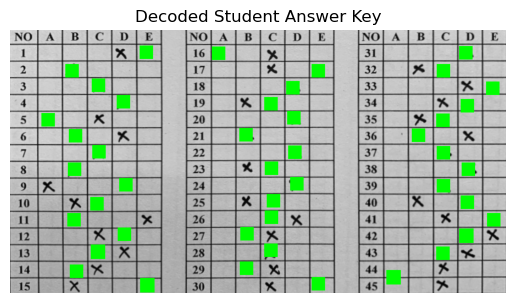

In [3]:

base64_string = "iVBORw0KGgoAAAANSUhEUgAAA+MAAAIQCAIAAABllyiEAAAgAElEQVR4AWzB/ZPedXU+8Os65/25dxdiJCQBEqxCImhRHJDwECBBIEFBUR7EqVJ/qX34hzqjbaftdDrTzhSFKGGVBDECJgQqBiWIMAgaRDQqZZPd7L2f9znXd+bM3DPp9Pt68etf//r69esB9N7HcVQxs2EY1goAMwPA0lpz93Ec3d3M1tbW3J0FJTMjIjNJeiE5jmNmDsXdJbl7ay0iptOpJHeXlJkkMzMi3H1ubu7MmTMHDx48fPjw1q1b9+zZ85GPfKS1lplmBsDdAZAEkJkoJM3M3a24e8xIAiAJgBVJZubuZpYFAEkAknrvEdFaG4bB3Um6++rq6rFjx77//e+/++67N9xww65duzZt2kRSUmYCyExJJFsxM5KSALBIAsAZSeM49t5R3N3MALC4O0lJ7t57X11dzcxWSKqM47i2tvbKK69861vf6r3fd99911577WQyGccxM0kCiAhJ7m5meRYWMxuGwcwkASApKQtJAJIA8CxZzMzdSUoCQFJSRJjZdDp94YUXnnzyyZWVlZ07d1533XUbNmxwd0kkJfXeJZG0s6iQbK2ZWWZGRGYCMDMALJIykyRmMlNSFjMjqULSzCSRlPTee+8dOnToySef3LRp05133nnFFVcMwyAJAIuZqZgZycyURBJFUhQza62psLg7SUkRAYBkFJJmRhJAZkoiCUAz0+n0jTfeOHz48Ntvv33llVfu2bPn0ksvdffMZDEzSZkJgCQAFkmZGRGSAFgBIAmAmQHITBUULwCyAJAEQAUzJAG8/fbb+/bte/rpp7dv337zzTdffPHFCwsLADJTEmZUskgi2VobhkFSZkoi6e4kI6L3npkomTmdTjPTC8ksKJIAkDQzFJWTJ08+//zzr7322gUXXPDJT37yoosuGoahtWZmETGdTiMCwGQycfeI6L0DcHeSmUkSgEovksyMJIDMHMex9w7A3VsBkJkASAKQBMDMJPXez5w5c+rUqd/85jevvfbadDr96Ec/um3btvn5eTNrrQ3DAKD3HhFmNgwDgN67JMywqKCQdHeSmdl7B0AyMyOitUay925mJAGQRJGUmZLMrPf+9ttv/+IXv1hZWfngBz942WWXnXfeeZIyU1IWku5OEoCZtdbMLDMlAXB3kpkJQBIASQBYUEi6O8nee0RIQpGUmQDcvbVmJSJOnjx5/PjxEydOXHDBBVdeeeWmTZvMLCIkubuZkZTk7q01AL33iABgZioAJGUmAHcHYGaSeu9ZxgKgtUZSEmZIWkFprWXm0tLS64Xk9u3bL7nkkrm5ucxUMbNhGFprAKIAaK25u0przd0BjOOYma21yWTSWuu9j+MYESRtBsXMAIzjmJmTycTd19bWAGQmSTMbx/G11177+c9/fumll/71X//1Rz/6UQDT6dTdJUUEC2YkkZRE0sxIquAsvXeS7m5mUQB4kZSZkgCwACApCQDJzCR5+vTpf/3Xf/3hD394+eWX79ixY8uWLa01FDMj2VoDoEIyM9fW1sZxBNCKmZGUlJkk3Z1kFpKtNXcnKQmACgDOSALQWgMwjqOZTafTl1566fDhwysrK1ddddXVV1+9fv16FjNzd5JmRlJSRGSmmQ3D4O5ZJJEEkJkRAcDMSAJQQSEJgKS7o7TWzGwcR5LubjOZuby8/Mtf/vKxxx5bWVnZvXv31VdfvX79egDuPgyDu0uKCEkkAWSmJADuThKAmQHovQOQBIBnkQTACoDWmpmpsGRhASCptbaysvLCCy8cOXJkOp1eUzZu3OjuKiQBkEQhiaKzkARAUlJmAiAZEZLMjCQAFgCSSALIGUkAzMzdzSwzV1ZWXnvtte9///t//OMfb7zxxh07dqxbt87dJWWmJJLuDiBLRGQmgNbaMAxmBsDdAeQMAJKSMhMAyYgAYGbubmYAdJbMlEQSgMo777xz9OjRV199ddOmTTt27LjsssvOOecckihZIoKkmQGIiMwkOQyDuwOIgkISgCQzIwnAzDKz9y6ptWZmvXcAwzCYWRZJvffM9LK8vMwXXnhh3bp1ANw9MyNiHMfMdHdJESEJMyTd3cwiwsxaaxGhAkAFRRIAL5LGccxMd2+tkcxMSWbm7r33zJQUEQBISgLQynQ6feSRR775zW9edNFFDz744DXXXNNaiwgUM8tMMyMZEZIAsKCYmbuP45iZkgCQlATAzCRFBIuZAZCUmZIAmBmKmWnGzM6cOfPjH//4scceO3ny5K233vrpT3/6wgsvJBkRmQlAM5wxM0kkAVgBkJkskjLTzDIzIswMQERkJkkAZgZAUi8ASFphkbSysvL8888/9NBD7v6Vr3zlhhtumEwmEUHSzCJiHEdJLACySOJZJAEgaWYkVTDDs0iKiHEcJbXW3F0SiiQAZnbmzJnnn3/+8ccfX11dvfXWW2+66aYNGzZkJoDWGoDee0SQlMRiZiQl9d5JurukzARgZu5OEoCkKCRRWCRFkWRm7g6ApJkByMyIWFpaOnTo0OLi4pYtW+6///7LL7/c3c3M3SWxZOZ0Os3Mubk5d89MSSS9SBrHUVJrzd1VMpOkmaFkpiSSZqYCwN3NDEBmRkRmmpm7S3rjjTcOHDjwyiuvXHbZZXv27Nm+fbu7Z6YkACQBSDIzd5eUmSiSMhMASQAkAUhiUclMAGYGwMzcnWSWiJBEUgX/29tvv71///4jR45cc801d99995/92Z/Nz89nkcQiKTMBqACQRNLdAUgCYGYkJeVZvGQmi2YAuLuZAZCEkpkoZva73/3uwIEDR48eveSSS77whS9s375dkpmxSIoIM3N3Sb13ScMwtNZUAKgAyMyIyEwVdyfZex/HMTPd3cxImhlnAKiYmaTM7L0vLS397Gc/O3jw4OnTp/fu3Xv99defe+65VlBUALTWJEUEAJIonEEhqQJAhaSkzJREUgUznAEgiaSZ9d5ffvnlJ5544uTJk1dfffWuXbs2b94sCUAWADyLmbk7SUmZCaC1RjKLJBSSmGGxIikzJWFGkpmRRCGZmSdOnPjBD35w7Nix7du3f/azn73kkkvMjGeRhNJac/coKJIyUyUiALTWJAEwMwC99yiSzMzdSUoCICkiMtMKAElmRnJpaenZZ5/94Q9/OAzD7t27r7rqqoWFBRRJLGYmiaQKSTOTBIAkAEkAJJlZa41kRGQmSTMjKQnFiqSIkOTuJNfW1lTcneTq6uqRI0cOHDhw4YUX/t3f/d1ll10mKSLMTFJEoEgCIAmAmbm7mfXeI8KKJMxkpiQWAJJImhmAiMhMkmbGIglnMTN3f/fdd7/xjW8cPXr0zjvvvP3227du3TqZTFAiovfu7gBIAiAJIDMjAoAVkhEhyczcnWRmopAEwKICQJKZAZAEQKW1RrL3bmbLy8uHDx/+7ne/O47jHXfcsWvXrnXr1mGGZ9GMFZKSMhNnyUySKJIwo8Li7pnZe2cBEBGZaWaTyaS1lpnLy8uvvPLKf/7nf7733nt33333TTfddN555wFw99aamWVm7z0zSQLITEn831QASAKgkpmSzMzdbYakJMxkMTOSkgBEBIClpaVnn332qaeeioibb755586d5513npkBIAmAM5JYJJE0MxZJmSkJMyQjQhJJSSwoJM1MM5hhMTNJq6urx48f37dv3+9+97u9e/fedNNN55133mQyIZmZJK1EISkpIjLTzFprJCW5OwBJmakCQIWkFcxIAkASgKTMlEQSAEkzI/nLX/7ywIEDL7744tatW2+77baPf/zj55xzjpkBUMlMSQBYMlMSSXc3MwBZALAAkOTuEQHA3QFEhCR3N7PMBODuJCMCgJkBYDGzlZUVvvDCC+973/siwsxISgIgCQBJABGRRRJJLyjuLmkcx4jQDEl3JwnA3YdhkDSOY2aSNDMAmSmJpLur9ELSiheWhx9++N///d/Xr1//1a9+defOnZPJJCJU3F2SmUmKCAAsZiYpMwGYWRYAJM0MQGYCkIQiiaSZScrMiCBpZu5uZgB675kpycxWV1d/8pOfLC4uvvPOO7fddttnPvOZzZs3S+q9R4SZuTsASREhqbVmZpIASAJAEkBmWslMkq21zOy9q/TeI8LMWNy9FwDuLikzzczdSWbm6dOnn3766UceeWRhYeHBBx+8/vrr5+bmMpMkAEm9dwCS3J1kRPTeJXFGUmYCYDEzSZxBkQSApKQomWkzkiJCkpm11s6cOfP8888fOHBgdXX11ltvvemmmzZs2JCZktzdzDKz956ZkgCQlERSUmaySEIxMy9mBqAXFEkAzAxAZqKQdHeSkgCoZOapU6eeeuqpxcXFCy+88P777//IRz4yDIOZkZSUmSTdfW1tLSImk4mZZSaALFYk9d5JttYkRWGxIikzAbg7SUlm5u4kM7P3npmSzMzdJf3qV786ePDgK6+8cvnll+/Zs2fbtm3uLikLCwAzc3dJESGJJM4iCQBJACRRJGUmAHcnKYkFgKSIyEwAklA4k5knTpzYv3//c889d/31199zzz0XX3zxZDLRDEsWFgAqAEiaGQpJAJmJEoVka83dAWSRBICku5sZAEkAVEiivPPOO9/73veOHDmyffv2Bx544MMf/nBEAJBkZgAy04qkiJDk7gAkkQSQmQCs6CxWskgyM5KSzIwFJTMlmRkLgOXl5Z/+9KcPP/zw6dOn77333htvvHFhYcHMVFgkZSYAFZLujhmSkkhaycyIAEDS3QFkIZmZEQFAhSQKSSsk3X0cx5deemn//v0nTpy44YYb9u7de8EFF2QmSRWSKCQxIwlFkruTlJSZkgCwANAMixUAWUhaycxxHCVZiYgTJ048+eSTR48e3bZt2wMPPLBt2zYzAyCJpJlJymJmrTUAkkgCiIjeu2bMrLUmKTMBkDQzSQBYAJC0Iikieu+ZCcDMAFg5c+bMM88889hjj83NzX32s5/dsWPH3NwciiQWACTNjKSkLCQBSMpMAGbm7iQlRURmuntrjaSkiMhMm1EhCUBSZkrKTHcnubKycujQoW9/+9ubNm3627/920svvTQiSEoiCUAzKCStAFhdXe29D8PQWgMgiSQAklnMDDMkAUQEAJLubmYAJAEwMxYzy8zf//73X//6148dO/b5z3/+tttuu/DCCyeTCUkAvaiYmSSSZkYSRYVkREhydzMjqYIZkmZGUhIAM0MhCSAze+9m5u4kzWxpaemZZ5757ne/m5l33nnnrl27zjnnHBRJAMyMJAAVFhUzQ+FMZmJGEmYyUxIAL5nZe1cxs977dDolOTc3N5lMSE6n05dffvnf/u3flpaW7r333htvvPH973+/mbm7mZHMIokkgMwEQBJAZpoZSUkkJaFkpqTMBOCFJAAzUyGZmREBwN0BZGZEWJH0xz/+8ciRI88880xm3njjjdddd935559vMwAkASAJQBIASVbcnWTMSCJpZpwBkJlmRlKFBf8/JM0MwHQ6PX78+L59+37729/edtttN91008aNG4dhMDOSZoaSmZLcHUBmSiKpAqC1RrL3npkkAWSmJJJWSKoAkMQZFQBmJomku5vZG2+8sbi4eOzYsYsvvnjv3r1XXnnlOeecgxIRkgBIQmExM5IRkZmSAJA0M5IAIkKSu0cEgGEYSGaRRNKKpF7MbBiG1prKZDI5c+YMjx49et55543jKAllGAaSEUESRVLvPTNJttbMTFJmokQBIAmFM0Mh2XuPCADuTlIFQGYCkNR7z0w7i7sDMLNvfetb//Ef/3Huuec++OCDO3funEwmmQkgM1trJM0sMyNCEgCSZkYyMyPCS0Rkppm5u5lFRO8dgJUsZgYgC4skMyMpycxIAlhdXf3JT36yf//+t99++5Zbbrnzzjs3bdoUJTNJDsNgZgAiIjNba2aWmQAkASApCQBJdwcgiaSkiMiiQtLdAZDsvUcEADMDIIlka83dJZ06derQoUMPP/zw/Pz8V77ylZ07dy4sLEREFkkAzEwSSTOTFBGaMTMAkgBIYkGxIikiMhMASRRJACSxAIgISa0sLy8///zzjz/++JkzZ2677babb775/PPPlxQRJN1dUkRIykwVAJJYAKgAkETSzNy9tWZmEZGZJCVlISkpM93dzFhUAKgAOHXq1FNPPbW4uLhp06Z77rnn4x//+NzcHABJUQC01syMpJlFhCSSmRkRkty9tdZ7jwgzAxARmcliRVJEsACQRNLdzYwkzpKZvfdf/vKXBw8efP3116+44orbb7/90ksvba1JykxJmCEJgCQASQBIokgCIIkFAEmUzERRIWlmKJKySOKMmbl7RPzqV7/6zne+c/To0RtuuOGee+7ZsmVLa40kABUAmSnJCookAGbGIgkzJAHkDEkzk5SZnJEEwAoASQBYJGXmO++8c+DAgSNHjlx66aVf+tKX/vzP/7z3HhGZiZKZkty9tQZgHMeIYMEMSXc3MwCSSJoZSUm998y0ghlJJM0sMyNCEkkrAE6fPv3SSy995zvfeffdd++///5du3bNzc0BkASAJAAVACoAzEwSSTMDEBGS3N3MJEUEACsAJEUEAEkRISkzSbo7SUmZSdKLmU2n01/84heLi4u/+tWvrrvuujvuuOOCCy7ITJKSSJqZJBRJmSkJM5JYzAyFJADNACBpZpJIujsASZkpiaSZ9QJgGAZ3j4gTJ0784Ac/ePbZZz/0oQ996UtfuuSSSwBIykySViRlJookkq01d8//zczcHUAWM3N3FJKSMtPMhmEAIAlAZq6trUWEFS/T6fTpp59+9NFHFxYWPve5z11zzTXz8/OSAGiGpM1I6r1nprsDyGJm7m5m7p6ZvffMbK25exYAnAGQmSTNTFJEsKBIWl1dPXTo0L59+zZu3Pi1r31t27ZtEdFay0wAZgYgMyWZGYqZkczM3ntmekFRwQxJAJIASCJpZiokAZCUBMDM3J0lM0+ePPmP//iPL7zwwt13371nz57NmzeTRDEzkr33iDAzFM5IwkxmSgLAgiKJxYoKADNDMTMAkjITgJmRBHD69Olnn332e9/73urq6l133XXzzTevW7dOEgBJAKxIykxJLJkJgP9HZqrgLJJQJAFwd5KZCUASyd77dDqVNBQzG8fxpZde+pd/+Zfl5eX77rvvuuuu27Bhg5m5u5mRVAFAUgUASQCZaWYkUSSRBKCSmZJIurskACQBSCKZhWRrjWRE9N4BtNbM7A9/+MORI0eeeeYZSTeUiy66yN0jQgWACs5CEgBLZkZEZkpiMTPOAHB3M9MMipkBkJQFgJm5O8npdPryyy/v27fvrbfeuvXWW3fv3r1x48ZhGMyMJTNVrAAgCUBSFgCtNUkRIYmkpCxm5u4AMlMSi5mRBCAJM2YmicXMfv3rXz/++OPHjh3bunXr3r17P/7xj8/Pz0sCkJkRgbOQNDN3N7NeJJmZFzOLIsnde+8kh2EgmZm998wkOQyDmUXEOI4RYWatRASAhYWF1dVVHj16dN26dZkJoPceESQnk0lmAiDZWjOz3ntEWMkiCQBJAJmpgrOQdPdWAKgAMDOSACSN49h7B5CZANydpCSSZgYgIh555JFvfvOb559//oMPPnjNNdcMwwBAUma21tydZETkTESYWWuNZESQHIZBhaSVzOy9Z6a7k8xMSWZGMotmSJrZMAzuTlLSysrKT37yk/3797/11lu7du266667Nm7cGBEAVEhaUWFRsUJSBYCZuXtEkDSzKJmJs5DMzN57ZkoiiULS3Vtr7r68vHzo0KFvfetbrbUvf/nLN95448LCQkT03jMThWRmmllrDYCkzOy9R4SdBYUkgMy0kpm994iwIolFMyQxY+X06dPPPffc448/vrq6umfPnt27d2/YsCEKAJIAJLFIykwVFjMDoAJABQBJm5EEQFJEZCYASSxmRlISAJIAVJaWln7wgx8sLi5u2LDh/vvv/8QnPtFaA6CZiMjM1tpkMjEzSZkJgMXMSJpZZvbeI4KkJAAkAWSmpMwE4O4Aeu8RIcnMhmGYTCatNZKSskyn01dfffXAgQNvvvnmxz72sdtvv33btm3DMACQlJkoknAWzgCQhCIJAEkALAAkZaZmAJC0AiAzI0ISCkkrmfnWW289+uijhw8fvv766++9994tW7ZwRmcB4O4kUUgCIGlmJFXMDEBESAJgZpIiIjMBuDsLgCwkW2skVVgARMRvf/vbJ5544vDhwx/4wAf+4i/+4sorr4yI3ntESHL3zBzHEcAwDK21zIwIKxHReyfp7q01dwcgCcXMSEZE710SSRRJAMzM3SVlpgqKpOXl5ePHjz/66KN/+MMf7rnnnr179y4sLGSmCkkAkqyQzAJAEkl3J9l7z0x3NzMVACoANAMgM1XMzN1JSspMAFZIjuP46quvLi4uvvnmm9ddd92nP/3pCy+8MDMBZCYAMwNAUiUzSZqZpMwEkJkkzYwzADRDshVJEQHAzFQyE4VkZgIwM5IRceLEiSeffPK///u/t2/fft99933gAx+QxAKApLsDUMnMiADg7mYGgKSZZZHEomJmJCVlJkkAJN3dzCRlJgBJEZGZADLTzObm5tbW1p588sn9+/e/733v++xnP/vJT35yfn6epJlJGscxMwFwRlJESBqGwd0BZCYAmwGQRRKA3jvJ1pq7A9AMADPLzN47STNzd0kAzpw5c+jQoYcffnjTpk1/9Vd/tX37dknuTjIzSQJQMTMVMyNpRQWApMyUhMICIDMlASAJwMyyAMhMzZiZuwNwdzP705/+9A//8A/Hjh37/Oc/v3fv3o0bN2ZmlNba/Px8RPTe3d3MAKiQNDMWlSwASFphASApZ1CsqJBsrZlZFJIrKytHjx5dXFycTqd33333zTffvLCwQDIzJZG0QlIzAEiiSEJhAZCZkjITgJkBkMQiCTOSzIwkgMzsvWemJHc3s3Ecjx8//s///M9nzpy57777rr/++o0bN9oMgMzEWTITAAuKJBYAJAHo/wBA0sxIZiYAkihWJPXeJZE0s/fee+/IkSNPP/10RNxwww07d+7cunVra633Po5jZgLITEkoLJghmZmSALAAIIlC0mYAZJHEAkBSZkYEAJLubmarq6uvvPLKvn37Tpw4ceutt95yyy2bNm1qrbk7AEmZCUCSu5sZCwCVzATg7pkpiaRK7z0zzczdSWamJABm5u4kJWUmAJKSAEhiMbMTJ04cOHDgxRdf3LJly+233/6xj31sYWFBEklJmYkZSSxWAGQmADPzQjIzI4JlHEdJrTWViJDk7maWhUUSADOTlJmTyWRtbY3PPffc/Pw8SUnT6TQiSC4sLJAEQLK1RnIcx8xkwUwUkjkjyd1bayQjgsULAEkA3L0VSdPpdBzHLCTdHUBmAnD31tra2to3v/nNhx56aMuWLV/96levuuoqL1m8kIyInOm9A2itmVlmAmitkQQgiaSZAYgCIDMBmJm7m1lmRlEB4O6TycTMSGbmmTNnXnzxxf379//mN7/ZvXv3nXfeuXHjRklm1ktmkrRCUhIKSXcnCYBFUmYCsOLuWQBkZkRkpmYARHF3kgBImpkkkuM4Hj58+KGHHnL3L3/5y9dff/1kMhnHURKLpMyURHIYBjOTFBHjOEZEKwAk9ZIFwDAMk8mktSYpM82MZESgSCIpCYAVFZLLy8vPPffcwYMHV1dX9+zZs2vXrg0bNozjmJmSAKiQbK25O4CIyMy1tbXe+2QymZubc3czAxAR4zhmJgCfiQiViABAUlJmkgRgRRKKlT/96U9PPPHE/v37zz///C996UtXXnmlmZE0M5IAImJtbc3MFhYWWmsAJOEsJIdhaK313s+cOQPA3c0MQGb23iUBkARABYAKAHe3AoAkgOl0+tprrx08ePD111//6Ec/umfPng9/+MOTyURSFkksACShkMQMCwBJJAFIYgGgAoCkpMyUZAUlS0RIYgEg6Xe/+91jjz32zDPP7Nix47777tu6dStJAGYGIDMlkTQzFsyQlETS3UkCkJRFEgAWFRRJZkYyMyMCQGvNzFQyEwBJM3vrrbf279//7LPPfuhDH3rggQc+8YlPkJTUe4+I1towDBExjqMkd2+tWZEUJTPNrBUzy8yIyEwArUTEOI6SSKqgSMIMSUkRIWk6nR4/fvzRRx89efLkF77whb17987PzwNQYVEBYGYsACQBIAkgIgCQdHeSkgBIiogsAEiqACAJgCTOIomkmfXeX3311cXFxTfffPPaa6+94447LrrooswEQFKFpJmpZCZJd5eUmSQlATAzAJI4IwnFzNxdUhYAKgBYzAyACoCIePPNNw8cOPCzn/3syiuv/PznP79161YALF7MTFJEZCZJSVEkRQSA1pq7m5kKZlQiAoC7WwEQEQDMTFJmspjZOI6S5ubmxnH83ve+t7i4uH79+s997nM7duw455xzMtPdAYzjmJmScJaIkDSZTIZhMDNJmWlmKGZGspfMlGRmrTUzk5SZ+N8iAqW1BoDkysrK97///X379m3atOlrX/vatm3bUIZhyEISMypmRtLM3F0FgKSIyMzWGkmUiMhMSTyLCsksEZGZJNuMpN///vdf//rXX3rppbvvvnvPnj2bN28G0Iu7z8/Pm5mkzARgZgAkmRlJACQzkyQASZkJwN1ZWmuZ2XufTqeZiRkrADKT5GQyaa1JykwAp06deuaZZxYXF8dx/MIXvrB79+7JZGJmmQmApJmRNDMAkjITgJmhqKCQNLMokgC4O0kAkkiikFQxM5TMRMlMSWYWET//+c+/8Y1vnD59+otf/OItt9yyefNmM8tMAL33zJREEjMkUTKz956Z7m5mJFEkkbQiKSIAmJkkzJCUBICkmQHovWcmgGEYlpaWjhw58tRTT/Xery+bN2+eTCYke+8RIYkFgCQWSQBIAiCpkpmSWCQBcPfWmgpJFZKSAJAEoBkAJM1sHMef//znjzzyyG9+85tPfepTu15zAAwAACAASURBVHfv3rRp0zAMZiYJgCQAkszM3c0MQET03iWxuLskkgB675KymFlrzcwAZKYkACTNTIVFJSJIuruZ/frXvz5w4MBPf/rTLVu23HrrrR/72MfOPfdcSWYmKTMlASAJQBJJMwPg7gBIujuLmQHITJXeuyQzA5BFkpmRlJSZZubuKO6emRHh7isrK/zxj3+8sLAwjmNEZKYkAPPz8yRXVlasuHvv3czm5+eHYcgyjuOZkpkqZjaZTObm5iaTCclxHDNzeXl5dXU1M8dxlDQ3N3fuueeuW7fu/e9/v5mtrq5m5jiOvXd3NzMAmSnJ3Vtrmflf//VfDz300EUXXfSXf/mXV1999TAMJCMCQEQMw2BmmSkJgKTMjAgAmUlS0mQyIZmZKysrmTk/Pz83N6cynU4z08zcfTKZuHvvfW1tLTPdvbUGICIys7U2DIOZraysHDt2bP/+/W+99dbu3bs/85nPXHDBBZIARMR0Ou29AxgKySxm1ns/derU6upqa21hYWF+ft7dp9PpqVOnxrKwsPC+971vbm5ufn6e5DiOEaHi7pkZEQDcnTM5s7Ky8qMf/ejb3/723Nzcl7/85Z07dw7DMI5jZnJGUmZKcncUSVlaa8MwRMTS0tK75U9/+tOZM2daa+vXr9+0adPmzZuHYRjHcTKZzM/Pk9QMSRSSKJJITqfTF1544cCBA9Pp9LbbbrvxxhvXr1+fmZIyEyUiJLl7a83dI2J5efntt98+derU/Pz8unXrhmForbl7730cR3c/55xzFhYWWmsoJAFkpiSSmSmJZGYCGIYBgKSIIOnu77777hNPPPHYY4+df/75DzzwwFVXXTUMAwAWACwAMlMSSTOT1HtfXV2dTqcA5ufnh2HITEmZiSIJZRiGhYUFABGhQhJAloiQ1ApJM4uI11577eDBg6+++upll122Z8+eyy+/fG5uDoCkLCiScBZJmGHBWTijGZIAVACokAQgKSIykyRmTp48ubi4+PTTT1999dX33nvvBz7wAXfPTEnjOPbeJbl7aw1Aa20ymZCUlJlra2vT6RSAu5PsvZOcn59vrbGgRETvfSxmNgzDZDJhGYbBzDIzIsZxzMyh/PrXv/72t7999OjRSy655P7777/iiiusAIgISe5uZgCySEKR1Fpzd5JmlpkRIclKZkYEgGEYzCwiJJFEUUGRlJkkzQwAyeXl5RdffPHRRx/94x//eO+9995xxx0LCwuZCUBSZgKQBEASZ8xMUmZKAiAJxd1JSiIJQFJmSspMAJIAsEhiASApMwGYWWttbW3t1VdfXVxcfOONN3bs2PHpT3/6oosu6r0DaK2ZGQCSkkiqRERmmhkASShWJJEEICkzzaz3LsmLmWkGAEkUFkkAzCwiXn/99ccff/zFF1+84oorHnjggQ9+8IOZ6e5WJGUmAEkR0XuXBMDdSUbEOI6ZyeLuJAFIIomSxd1bayQBRIQkku4OIDMBuDuAiHD3iNhfNmzYcPfdd1977bXz8/MRASCLu5sZZkgCkEQyM1kksUQESTOTFBEsZubukkhKykzMkJQEQNIwDJIALC8vHzx48JFHHtm8efPf/M3fbNu2DQDJ1lpESDIzzJDEjKTMBMCigmJm7m5mEZGZEdF7J2lmrbXMNDOSmSmJpbWWmeM4ZuZkMnn33Xf//u///tixY3fdddeePXsuvvhid2dZK3NzcwAyU9L8/HxrDaX3Po5j7z0zJZHMTABm1lozMwBmFhGrq6vLy8uSAGRma21hYWFubs7dSUoCQHJ+fj4zSb777rs/+tGPHn/88d77XXfddcstt8zNzZFEMTPMmBlJSQAkZSZJSQAkAWCZTqerq6vDMJjZMAxmBoAkZkgCICkJQBQza60ByEwz670fP378n/7pn5aWlr74xS9+6lOf2rx5s5lJitJ7z0wzA0ASAEkA4zi+9957//M//wNgMpm01gBMp9Peu5m11ubm5s4999z5+XmSZubuksyMJABJALJIAhARANy9tba0tHT06NGnn356Op1eWy644ILJZOLumdl7l+TuJFXMTFJEuLuZoUTE6urqUplOpxFBcjKZnFOGYSDp7nNzc8MwmFlmYkYSCouZjeP48ssvP/LII2+99danPvWp3bt3b968eTKZAMhMACQlsUhCWVtbe++995aWliJiYWFhbm6utZaZ0+l0HEczmyuttUlhyQKARRJJM8siyf4fXXDilOWZ5Q34d879PO8LLwiigCxuAdxQowmiAVc2NYlLG5eku6em09M9M13z13TVbNXVU9VT091J220WRQ2ICYqKK+6KuwgCAir79j73fc5XdVdRlamp77qYjTHM3NHR0dDQcPv27YKCgm3btq1cuTI9PZ2ImFlVxSNPPGNMEAQi4jxrLQBVJSJmBuBmEJFzLhaLJRKJMAwBEJGqOueYmYhUlbwwDI0xRCQiAIaGhuj69espKSlTU1PWWlVlZhFR1WQy+fLly+HhYedcGIbMnJGRsWDBgnnz5hljrLUjIyOPHj3q6+sbHx+PoiiRSOTl5eXn58+ZMyclJUVVx8fHOzo6Hj9+3NHR4ZyLx+NE5JxLSUmZP3/+e++9t2DBAlV1nqoyMwARUY+IYrFYEASHDx/+4osvcnJy/v7v/76srCwIAlW11gIgImZWVfJUFYCqioiqiojxiAhAFEWPHj3q7OwsLCxcsWJFSkqKiCSTSWstAGYOgsAYIyLWWhExxsRiMWOMtXZ6ehpAampqPB6fnp6+du1afX19T0/P1q1b6+rqsrOziQiAtTaKIvGIiD1VBWCMUdVLly6dPn26o6MjFotlZ2eHYTgwMDA6Ojo1NRVFETMXFhZu27Zt69atubm51gNgjAmCwFobRREzx2IxYww8VZ2enp6amhocHLx48eJ3330Xj8d//vOfV1ZWxuPxKIpERFUBkOecExEA6tEMAFEUvXr16tGjRx0dHQMDA5OTk0EQJBKJtLS0WV4YhkEQLFiwoKioKJFIiIhzTmfQDABEZIyZnp5ua2traGgYGxvbtm3bpk2b5syZQ57z1CMi4zGzc254ePi519nZOTQ0FEUREaWnp6emplproyiKx+NpaWmLFy8uLS3Nzc2Nx+MAVNU5B0BVrbWqaoyx1gKIx+NBEDjnRISIhoeHm5ubjx8/Pnv27IMHD65duzYIAlVlT2cws6paawEws3Out7f33r17HR0dU1NTzExEIuKci6LIWsvMAIwx2dnZK1asWLlyZWZmpogQkaqKiKoSETOrqoioKjMbT0SePn16+vTphw8fLlmypLa2dsmSJWEYwlMPgIioKgBmBqAeAGaGp6pEhP+NiFRVRAAQETydAYCIVNU5JyJEFASBMQaAqvb399fX1589e7asrGzfvn2FhYXGGOfc0NBQR0fHq1evkslkPB5PTU1NSUnJycmZP39+ampqFEXj4+MvX7589OjR8PBwSkqKMSYWi73zzjtFRUVpaWlEFIahiLx8+fLBgwfPnj17/fq1tTaRSMyfP3/ZsmWLFy+ePXs2M6uqMQZA5Blj0tLSenp6vv3229bW1uLi4v379y9ZssQ5F4vFEolEFEVTU1OYoapEBEBVRQQAeQBEhIiiKBofH1fVuXPnpqamTk1NAWBm8dgjIvVERFXJAyAiRBQEgTFmaGjo0qVLx48fn5iYOHToUHV1dSwWg6cePFV1zokIewDGx8eHh4ejKAqCIB6PE5G1dmpqanJykohSZyQSiVgsZq11zpGnqiICT1VphqoCMMY45x49enTy5MmOjo6ysrLt27fn5eWJCHtEpKrwiAiAqoqIcw6AqjIzETEzgGQyOTo6+vbt2+Hh4WQymZ6enpubO3fu3DAMJycnrbWpHgBrrYioKgBmNsaoKjwimp6efvLkSVNT0927d5cvX75///6FCxcCMJ6ITHsiYoxhZiIKgsA5NzIyYq2Nx+MpKSmxWAyA84jIecaYMAyNMapKRABUlZmDIFCPPADqEZGqWmuZ2Vp7wsvKytqzZ8+6detSUlLEU1UAYRgGQUAz1IuiaHR09M2bN8xMRPCSnqrSDGZOJBI5OTmpqakARERVMUNVyWNmImJmESGiqamphoaGv/3tb/n5+b/5zW+WLl1KRPCSyaRzjjxmJiJmBiAiqioizjkARASPiJgZgHPOWisiQRCEYWiMERFVJSJVhSceMweeqkZRlEwmVTUMw7dv3/77v//7/fv39+7du2PHjsLCwjAMiWhsbKyzs/Pt27dhGIqXmZmZnp6emZmZmpqqqtPT02/evHnx4sXbt29FxFo7e/bshQsX5uTkxONxAKo6Pj7+8uXL7u7usbExIpqYmHDOZWRkFBYWFhQUzJkzJy0tjZmtZ4wJw5CZh4aGLly40NDQkEwmP/roo6qqqng8Dk9ViQgAEQFgD4DMoBmqSkQAJicnu7q6+vr6li5dOmfOHGOMiBCRMQb/H6rqnFNVYwwzqyoRWWvv3bv3X//1X0NDQwcOHNi8eXNOTg4zq6qIqKqIAGBmVSUiAMysqoODg/fv379169bw8HAymZz2nHNBEMRisdTU1LS0tOzs7KKionfeeScrKysMwyAImJmImFk9EXGeiKiqMSYIAmPM27dvW1tbW1parLUVFRWVlZW5ublEBIA8VRURzFBVmqGqAJLJ5MDAwKNHjx48ePDy5cvBwUFmzsjISE1NTUtLy87OzsjIiMVi8+bNe+edd7KysowxqgqAiHQGecxMRNbaBw8eHDly5MWLF1VVVdu2bcvJyQnDUFXhERFmqCoAIhofH+/s7Hz8+HF/f79zLhaLqarxRARASkrKrFmz5syZk5ubO3fu3PT0dGOMziAieOSJCBEBICJmJqKurq7Tp09fv349Nze3qqpq5cqVs2bNYmYics4RkYioKs0wxgBIJpNPnjzp6uoaGRmZmJiYnJxMJpPiRVEUi8Wcc1EUBUGwfPny1atXz5s3LzU1lYiSyaSqGmPIA6CqzEyeMSYMw6GhIbp27VpKSsrU1JRzjoiMMapKRAAePHjw1Vdf3bp1a3R0FEBBQUFNTc2uXbsWLVrknJucnOzv7z99+nRLS8v4+Pjq1as3b95cWlqanZ0NYHBw8OHDh6dOnbp9+/asWbNKSkry8vKcc93d3U+ePHHOffDBB3v37i0pKWHmyclJay0AnSEiQRDE4/HU1NQvv/zyT3/605w5cz7//PPy8nJjjPNUlZkBiEgYhsysqkSkqiKiqiJCRLFYDEAURdPT083NzdeuXSspKamrqysoKBCRKIrEA8CeqooIZoRhGASBc85ay8xhGCaTyevXr9fX1/f09Gzbtq2mpmbOnDnwjDHMrKoiYq1VVfYAMHMQBACGh4dPnjxZX1///PlzY8zq1av37t2bl5d3+/btpqam58+fp6en19bW7tmzp6SkxBhjrQXAzNPT08lkEkAYhkEQACAiZnbemzdvmpubjx8/PmvWrM8+++yDDz5IJBLOOZlBRMzsnBMRzCAiYwwRjY+PP3369OzZszdu3DDGLFu2rLS0dP78+enp6clksqen5969ew8fPkwkElVVVZWVlRkZGeqJiHNOVYmIPSJib2Ji4urVq42NjRMTE1u3bt20adPcuXONMcxsrY2iSFWJiGeQZ60dGxt7+/bt+fPnf/jhh66urng8Xl5eXlNTk52d3dvbe+XKldu3b0dRtGrVqp07d7777ruJRAKAc85aC0BnWGtFxBgTi8WCIFBVEXn79u3Zs2cbGhrmzJlz8ODBNWvWMLNzjjwAzAzAGMPM0x55xhgi6u3tbWpqamxs7O3tnT17dllZ2YYNGzIzM0dGRh49etTe3j41NbV27doPP/xwyZIlzjlrLXnwiAiAeKpKRMYYEXn+/HlTU9OjR4+WLVtWV1e3ZMmSIAhUFR4RAXDOiQgRMTMAEVFVImJPPXhEBEBVyQPgnFNV/B/MTEQi4pwTESICQB6A/v7++vr6s2fPlpeX79u3Lz8/PwgCERkfHx8YGOjs7Lxz587jx48nJiZisdjKlSurq6tLSkpisVgymRwcHHz27NmtW7cePnyYlZX1wQcflJaWzpkzJwgCIhoZGbl79+7ly5c7OjqysrJWrVqVmZnZ39//+PHjwcHB4uLirVu3rlixIhaLOefCMAyCwDmnqsaY7u7ukydPXrp0afHixQcOHCgtLVXVKIoABEGgqlEUASAi4xERPBFRVQA6Y3Bw8N69ez09Pe+99977778vIs45EVGPiACQB0BEVJWZiUhVrbUAwjBk5uHh4WvXrtXX1w8PDx88eLC2tjYlJUVVAaiqiBCRznDOEVEsFhOR/v7+Fy9eDAwMjHmTk5OqGovFiCjygiDIzs4uKSkpLi6ePXs2EYmIqhKRqoqnqkRkPAAiQkQi0t7efuLEiZcvX5aXl2/fvn3evHkiQkSqyszGGAAioqrOOREhzxgTBAERARgbG+vo6Lh79+7jx48HBwcBxOPxlJSUIAiysrIyMzOnp6fnzZu3atWqvLy8MAxVVTwiMsYQkYioKnnJZPLZs2enTp26e/fue++99+mnny5cuDCZTFprnXPqASAiVWVmAMycTCYfPnx48+bN7u5uABkZGampqc65yLPWxmKx/Pz84uLiwsLCWbNmBUFARM45VQUQBIExhoiMMQCcc1EUiUdExhhrbUNDw4kTJ7Kysnbv3r1u3brU1FQR0RnskQdAVQEkk8mBgYHnz58PDAw8f/6ciKw32yOi8fHxN2/ejIyMLFiwYOfOnYWFhUSkqkTEzEQEQFWdcyJiPGYWEWaemJj47rvvjhw5UlhY+C//8i9Lly4Vj5mjKFJV8uAxMwARASAefoSZiQgAETmPmYMgYGYAzExEImKMAWCtjaIIADMTkTGGmdUTkb6+vt/+9rcPHjw4cODAhx9+WFhYqKrJZHJ4ePjBgwcXL168evXq8PDw1NRUTk5ObW3t5s2bCwsLwzCcnp7u7++/efPm2bNnHzx4sHTp0h07dmzYsCErK4uZRaS7u/v8+fOtra2jo6MlJSWFhYVRFL1+/bqvr88YU1RU9N57761evTonJ0c85xwzAxgbG7ty5UpjY+Pk5OTOnTurqqrS09ONMclk0loLgDwAzGyMISL1RMQ5x8xEBCAIAgCvXr06d+7cvXv3qqqq3n///Xg8HgQBAJ0Bj4gwg4iYGQARAZAZ9+7d+/3vfz86Onrw4MHKysqsrCxmJiKZQZ6IsBcEATNPT0+/efOmo6Pj+vXrLS0tfX19sVhs2bJl7777biKR6OjoePLkycjISFZWVnl5+ZYtWwoLC4MgMMYAEBH1mJmI1AOgHoDh4eHW1tbz589baysrKzdv3pyXlxcEgaqKiKrifxMRVSUiVQVgrX358uX58+fPnTv39u3b+fPnr127trS0NDMzc2RkpKOj4/Hjx93d3bNmzVrv5efnB0FARACISH+EiJjZGGOtvX///uHDh1+8eFFTU1NdXZ2bmxuGIRGpKjz9Efamp6eHhoa6u7vv3Llz7dq1ly9fTk5OlpSUvPvuu7Nnzx4dHe3t7X379m1KSkpJSUlZWdmiRYsSiYQxBh4zE5GqkqeqRARAVcnr7Oxsamq6fv16QUFBdXX16tWrE4mEqgIQEXgiwszGmDAMjTGq6pybmpoaGBi4fPny2bNnnz17BmDRokXl5eWLFy9OJBK9vb1nzpzp7OwsLy+vrq5esmRJSkoKPPaIiJmJyDkHgD1jTBiGIyMj1NbWlkgkpqamnHOqSkTwmNk519vb+/XXX586daq/vz8ejy9evLiurm7v3r35+fnMTEQdHR1ff/11b29vZWXlxo0bc3JyALx+/frSpUsNDQ137txZuHDhzp07y8rKcnJyiKi3t/fcuXNNTU2Tk5NbtmzZt2/fO++8AyCKIhGBJ54xJh6PJxKJP/3pT3/+85/nzp37y1/+csOGDcYYVQXgnBMRVRURYwwA9QCwB0BEjDHxeNw519XV9fXXX7e1tS1btmzv3r2rVq0iIgAi4pyz1qoqe+rBY2ZjTDKZnJiYEJFYLKaqd+7cqa+v7+7urqqqqqury83NJSLnHDMHQUBE1tpkMumcC4KAmdUjoph37ty5L7/88vr160EQVFRU/OpXv1q6dCkRffHFF3/96197enrmz5//ySef7NixIysri4hERFWdJyJEFASBMUZVRUS9sbGxlpaWb775Jh6PHzp0qKKiIpFIqKrzABCRiFhrRSQIgjAMjTEAVHV8fPzp06dnzpxpbW0FUFlZuXXr1qKiorS0NGOMqo6Pj7e3tzc3N79582bjxo2bNm2aM2cOABFxM4jIzGBmAGNjY9euXWtqahofH9+8efOmTZvmzJljjGFm51wURSJCRMZTj5nDMIyiaGJi4uzZs998883jx49TU1O3bNly6NCh5cuXT0xMtLe3f/PNNxcuXAjD8IMPPvjwww9XrlyZkpJirRURIgKgqgCIyHnGmDAMjTHW2oGBgebm5pMnT86dO/fTTz8tKysLw1BEiIiZiUhErLXOOVWlHwEQRVFfX9+FCxcaGxs7OjpycnJ27dq1c+fOnJwcAP39/W1tbffu3cvJyamurl64cKFzTlVFhIiYGYB6AFSViIwxzAzgxYsXp06devjw4dKlS+vq6oqLi4MgcM6pKgAigqceEQFQDwARMTMRAVBV/Ah7AETEOaeq8IgIM1QVHhGJiHNOVY0xAPr7+0+cONHc3Pz+++8fPHhw/vz5YRg650TEOff69euLFy+eOnXq+fPnIpKdnb158+YdO3YUFxcHQWCtHR0dvX37dnNzc05Ozscff5ydnc3e0NDQ1atXW1paenp6Fi1atGXLlmXLlqWnp4vIgwcPvv/++6dPnxYUFGzZsmXDhg3Z2dmqGkWRc46IVPXVq1enT5++fPny4sWL9+3bV1paaowhImttFEUiAkBVARhPPWYmImYGEEURAFXt6upqaWl58uRJeXn59u3bMzIypqenATAzABFRVQBExMwAVJU8EVFVIgJgrR0ZGbl58+bx48ffvHlz8ODBnTt3pqSkqCcizjlVBcCeqgJQVeecqk5PT3d3d7e2tra0tLx69WrWrFllZWWrV6+21j59+vTBgwcTExOLFi2qrKwsLy+fN2+eqlprVZWIAJCnqgCY2RjDzACSyeTdu3ePHz/e3d1dUVGxc+fOefPmOedEhGY451SViACwB0A9a+3Q0NCNGzcuXrzY19eXm5v77rvvLly4MJFIMPPo6Ojdu3dv3LgxPj6+adOm2tragoKCMAwBOOestaoKwBhDHjMTkXPuxYsXjY2N169fX7FixcGDBxctWuQ8AETEzKpqrXXOMXMQBMYYAM65kZGRW7du/fDDD/fu3bPWlpSU7Ny5c8GCBS9fvrx+/fqDBw9UdfXq1dXV1aWlpfF4XESstUSknvEAOOestQDIM8ZEUdTQ0HDixInZs2d/9NFH69atS0tLM8YwMwBVtdaKCBEFQQBAZjjnRkdHnz59+uWXXz59+tQ5l5eXt3HjxtWrV8fj8cHBwQcPHty+fTslJeUXv/jF8uXLwzAEQETMbIxRVRFJJpPOOTNDVZl5fHy8oaHhm2++KSws/Kd/+qelS5eKiKoys4ioKhEBUFV4IgKAPPFUFQARMTMAVQ3DMAgCACJirRUR9ohIRIhIVa0XzGAPgKpaa/v6+n7729+2t7fv37+/pqYmNzdXVcWLoqi/v//w4cMXLlx4+/YtM69cubKurm7dunU5OTmxWMwY8/r162+//fb+/fs7d+6sqKjIyspi5qmpqUePHp0+ffry5cuxWGz79u01NTXxeJyIhoeHr1+/fu7cud7e3oKCgsrKyoqKiry8PCJKJpOqGo/HJyYmLl682NDQMDk5+fHHH1dXV8fjcWstM4uIqhIRAGY2xjCz/oiIGGNUlYiMMclk8sGDB/X19e3t7XV1dbt27UokErFYTD0iwgwigqeqImKMYU9VrbXOe/jw4X/+539OTU199tln69evz8zMZGYiUlURAcDMIqKq7BkPgHNucHDw0qVLR44cefr0qTFm06ZNO3bsKCwsfP369YULFy5dujQ8PDxnzpytW7fW1dXl5ubCY4+IVDWZTE5NTSWTyTAMU1JSwjAkosHBwYsXL54/fz6Kog+87OzsWCxmjAHgnBMRVaUfAUBEzBxF0bNnz5qbmy9evDg5Obly5cqamprly5enp6eHYWiMGRkZuX///uXLl4eHh1etWlVeXp6Xl2eMAUBEAIhIPREBQETM7Jy7e/fukSNHurq6ampqqqurc3NzY7EYEamqeESkM3iGMWZsbOzatWvHjx+/c+fO+Pj45s2bd+/eXVRUNDY2dvPmzStXrrx48SI1NfX999+vqKgoLi5OS0sLggCAzgBARABU1VoLIAxDZu7o6Ghqarp+/XpBQUFdXd2aNWsSiYS1VkRUFQARAVBVZg6CgJlVFQARRVF0+fLlo0eP3rhxg4jKy8t/8pOfLFu2zBgzOjra1tZ27ty5hQsXVlZWLl68OCUlRVUBsAcgCAIiEhEARMQzRkZG6MaNG+np6ZOTk8lk0jlHRADIY+aRkZHjx49/++23vb291tpYLFZaWrpnz566urqsrCwA4+Pj9fX1Dx8+3LBhwwcffJCZmTk2NtbW1lZfX3/lyhUAe/fu3b1798KFC+PxODNPTk7evXv3r3/968WLFxOJRHV19Y4dOxYvXhyLxQDojwBISUmJxWJ//OMfDx8+nJ2d/fnnn5eXlzOzqjKztVZEADjnABARAFUFwMxBEBhjRERVE4mEc661tfUvf/lLe3t7UVHR3r17q6ur09LSnHOqKiJRFDnnmNkYo6oyIwiCMAxV1VpLRGEYTk9PX7169ejRo/39/bW1tXV1dTk5OcxsrVVVImJm55y1VkSIiJlVVUSIKAiCMAyvXr16+PDhq1evElFlZeU//uM/lpSUxGKxNYclzwAAIABJREFUpqamP/zhD/fu3YvFYtXV1YcOHVq2bJkxJooiEVFVAM45ETHGhGHIzKoKgIgmJibOnTv31VdfBUHw6aefVlRUpKamWmudcyICQD3nnKoGQRCPx40xACYmJp48edLS0nLhwoWBgYHS0tK9e/eWlZWlp6eLCABjjIj09fVduHDh+fPna9as2bBhQ2ZmpqqKiKo650QEgDEmCAJjDBGJyOTk5M2bN0+dOjU4OFhRUbF169acnBwARKSq1loRAcCeqooIM8fjceectba1tfXIkSPt7e1hGG7ZsuWzzz5btmwZgLGxsZMnTx45cqSrq2vu3LnV1dU7d+5ctGgRM4sIAJ1hjGFm8YjIGENEIyMjZ86cOXr0aFpa2qeffrpu3bowDK21IkJEzGyMAaCqzjkA7JFnre3r62ttbT1+/PizZ8/mzZv34Ycfbt++fe7cuVEUTU9P9/f3P378OIqisrKyJUuWqKq11jmnqsxMRABUFYCqiggAYwwRdXZ2NjU13b9/v7i4uLa2dunSpWEY6gwA5AEQEVUlIgDqAWAPgKoCICIAqkpEzKyqIqIeEWGGephBRADEM8YA6O3tra+vP3PmzJo1aw4dOvTOO+/EYjFVBcDMo6OjV69ePXXqVHt7++DgoKouWrSourq6qqqqsLDQGBNF0dOnT1taWmbPnl1TU5ORkWGMGRoaunLlyunTp589e1ZYWPjxxx9v2rQpPT09iiJVHRsbO3fu3PHjx3t7e4uKirZv375x48bZs2cnk0lVZa+3t7exsfHy5csLFiz4yU9+UlpaamY451QVgHPOWquq7AEQEVU1xgBwzqlqMpl8+PDhyZMnHz16tHbt2v379xcXF0dRpKpBEBCRiKgqfkRViQgeETGzqlprR0ZG2trajh07Njw8fPDgwe3bt6ekpIiIqsoMImJmIlJV8lQV3sDAwNmzZ+vr67u6unJzc/fu3btjx44wDO/evXvq1KmbN28GQVBWVrZz586VK1cGQeCcU1UiYo+IRMRaC4CZgyAwxjjnbt++fezYsZ6enoqKih07duTn56sqACISEWttFEUAjDFEBICZwzAkIufc69ev29rampubu7u7S0pKNm/evGLFitmzZxtjVHVqaqqrq6ulpaW9vX3t2rW1tbUFBQXGGCICICJEZIwBoKo0w1r74sWL06dPX7t2rbS09MCBA4WFhclkUlWJyBjDzEQEj4jgiQiAKIoePnx48uTJCxcuRFH03nvv/fznP1+5cmUURR0dHadPn7548aKqrlu3rqqqasmSJfF4HICqAlBV5xwAIoJHRMysqsaY6enpxsbG7777LjMzc/fu3eXl5YlEgmeoajKZjKIIgDGGmVVVPCKy1vb09PzhD3+4evXq5OTksmXLDh48+MEHH8RisbGxsd7e3hs3bjx48ODgwYOrV68OgoCIRAQAEakXRRGAMAyNMfCYeXR0tKGh4ZtvvsnPz//1r3+9fPlyVRURACLCnqrSDJnBzKoqIuoRETMTkXixWIyZxSMiACICQFWJyBgDjzydAYCZRWRwcPBf//VfHz9+/Mknn1RVVWVnZxMRvGQy2dfX99VXXzU3Nw8MDDjnUlNT165du3379vfffz8zMzMIgqmpqRMnTty7d+/DDz9cu3Ztamqqc+7p06fff//92bNnx8fHN2zYsHv37mXLloVhaIxxznV1dZ3xBgcHly9fXltbu379+tmzZ0dRJCLGmLGxsUuXLjU2NkZRtHv37pqamlgsZq0VEVXFDOMRkXoiAo+Z1XPOvX79urW19ejRo69fv66oqPj0008LCgpSU1ONMaoqIgCICDPUExFVZWZjDBGJl0wmnzx58rvf/W5iYuLTTz8tLy+fPXs2MxMRABEBwMyqCoCZdQYzh2E4Ojp6/vz5w4cPP3v2LAiC2traHTt2LF68OJlMXr58ubGx8fHjxwAqKysPHDiwaNGiRCKhHmY456ampqy1MS8IAlV98+ZNa2vr2bNnnXOVlZWbNm3Kz88PgkA8AETEzESkqgCISFWJSER6enouXLjwww8/dHV1zZ8/v7a2tqKiIjc3NwxD9lS1v7//1q1bL168KCgoWLVqVW5ubhiGRKQeACLSGfCcc+3t7V9//fXLly+rvdzc3CAIAIiIqooIETGzqooIecxsjBkZGbly5cqJEydu3749NjZWU1OzZ8+e0tLSlJSUly9fXrhw4fz58z09PdnZ2Vu2bNm4cWN+fn5aWhozi6eqRKSqAFQ1iiIA8Xg8CILOzs6mpqa2trbc3Ny6uro1a9akpaWJiPMAMDMAVSUiZiYiVWVmY0wymbxy5crRo0dv3LhhjNm0adOBAweKioomJiamp6dVtbm5OQiC1atXFxQUxONxIlJVAEQEwHiYQUTMbIwZHh6mq1evpqWlTU9PR1GkqsxMRKrKzMaYwcHBkydPtrW1jY+PDwwMvHr1KpFIrFq16uOPP966dWtGRsb4+PiJEyc6OjoqKyvLy8vj8fjTp0+PHTvW0NAwMDBQUlLy+eefb9y4MTMzMwgCACLy8uXLEydOHD16tLe3Nycn57PPPquurs7OzjbGqKqIAGBmALFYzBjz5z//+fDhw7m5ub/4xS/KysoAiAgzO+cAEJFzzlrLnnoAiCgIAmMMMxtj+vr6vv3228bGxu7u7tzc3Kqqqn379i1ZskREnHOq6jwiYmZVFRHnHHnGIyJmBjAxMXHlypVjx469fv26tra2rq5u7ty5AEQEgKrCU1X8iKqGHjO3tLR8+eWXN27cCMNw8+bNv/zlL0tKSowxP/zww//8z//cuXPHGFNbW/vpp58uX77cGGOtVVXnnIhEUeScI6IwDIMgYGZjDBENDw+fO3fub3/7Wzwe/9nPfrZhw4ZYLGat1R/BDJ4B4PXr162trSdPnnz48GFGRkZtbe1HH31UVFTEzFEUqSoRqWoymezo6Ojs7MzLy1u2bFlaWpqqygz1mNl4AERkcnLy5s2bjY2Ng4ODlZWVW7duzc3NxQxVtdY655jZGKOqAIgoCAIAqnrp0qW//OUvd+7cSUlJqa6uPnToUElJCRGp6u3bt//4xz9eunTJWvvuu+/+5Cc/qaiomDVrVhRF4gFQVSIKgoCZ1SMiVR0ZGWlubj527FgikTh48OCGDRtisZi11jkHwBgThiERASAiEYEnItbaKIrevHlz6dKlEydOdHR05Ofnf/zxxzU1NSLS29sbhuHcuXOnpqYmJiYKCgrmzZsHQD3nHBExMxFhhnhEBODFixdNTU33798vLi6ura0tKSmJxWKqSkQAVJU8AOoBICIA6pGH/w+dQUTwiAiAqsJTj4iMMQDEU9Xe3t4TJ06cPXt25cqVBw8eLCkpCcNQVckbGRm5devW/fv3x8bGnj59+ujRIwDLli2rqqrasGFDfn6+qj5+/Pj8+fPz5s3bsmVLWloagHv37h0/frytrU1EysvL9+3b9+677wZBYK2Nosha297eXl9ff+XKFWvt2rVrf/KTn5SVlTGztZaZY7FYd3f3sWPHWltbi4qKDh06tHLlSlUlImYWEVUlIlWNPACBp6rOOXjsjYyMXL169ejRo48ePVq8ePEnn3yydevWeDweRRERGWMAqCoAIoKnqkQEQD0iYmYiGhsbu379+rfffjs8PHzgwIHq6uowDEWEiACIiKoSETOrRx4AVXXOvX79+vz58/X19S9evJg3b96BAwc++uijtLS0p0+fnjhx4syZMxMTE8uWLdu1a9fGjRvT0tKcc0SkqkQEQFVFxDknIgCYOQgCAPfv3z927Fh3d/eGDRt27NiRn59PnqqKSBRF1lpjTBiGRCQeERljxsbGrl69+v333z98+DAjI6O6unrbtm35+flBEIiI86anpx8+fHjhwoWsrKyNGzfOnz/fGAOAiFQVQCwWY2YRUVUAROSc6+zsbGpqamtrKykpOXDgQFFRkYhEUWStJaIwDI0xRGSMEQ8AEQFIJpP3798/ceJEa2uriJSVlf3iF79YuXJlEASjo6MtLS3ffvvtkydPsrOzN23aVFtbu3jxYiISEXgi4pwTEeccgCAIwjA0xgRBMDk52dDQcOLEiYyMjF27dpWXl6elpQEgImYGYD0RAcAeAOdZa4eGhv785z+3tLSMjo6uXLny0KFD69evn56eHh4eTktLe/369YULF7Zu3bpkyRJjDIAoilSViFQVgIgYY4IgYGaaMTIy0tjYePTo0fz8/F//+tdLlixRVeeciBARM6sHgJmDIAAgIs45IlJVEVFVEVFVIjLGABARYww8ImJmAM45VQUgIkQETz0RISL2jDEi0t/f/2//9m+PHz/+5JNPampqsrOziUg859ybN2+++eabvr6+V69edXV1jY6OZmZmrl+/vq6urrS0dNasWRMTEw0NDc+ePaurqystLc3IyHjz5k1zc/PJkycfP36cnZ2908vJyQFARMw8NjZ25cqVkydP3r17NzMzc/Pmzbt27SoqKlKPmcfGxi5fvtzY2Dg9Pf3RRx9VVVWlpKSoqrWWPFUFwMxBEBCRc05VMYOIVJWIJicn79+/f/LkyTNnziSTyeLi4v37969fvz4rKysIAlUVESLCDBFRj5lFhD3yACSTyadPn/7ud78bHh4+dOjQ+vXrZ8+ezczkqaqIMLOqEhEAVbXWiogxJhaLjY6ONjc3f/XVV93d3QDq6uo++uij4uJiANeuXauvr79165aIrFu37u/+7u/eeeedRCIBQD0ARATAeUTEzEEQENHbt2/Pnz/f3NzsnNu4ceOmTZvy8/OZWUQAMDMRASAizFBvdHT0+vXrTU1Nt2/fBvD+++/v2LFjzZo1aWlpqgpAVQFMT093dXV1dnamp6cXFxfPnTvXGKOq4gEgIlUFQETwROTBgweHDx9++fJlbW1tTU1NdnY2EcFTVRFhT1VFBAAzA2Dm4eHhy5cvNzY23r59e2JioqamZvfu3cuXL8/Kypqamrp9+/bp06evXbs2NTW1fPny7du3r1q1au7cubFYTFVFhIgAqCoAZlZVAMYYZu7s7Gxqampra5s7d25dXd2aNWsSiYR4qgqAmeGRB0BV2Zuamjp//vyxY8fu3r0bBMHmzZsPHTq0aNGiJ0+ejI6OlpaWdnd3M3NhYWF6erpzTlWZWUSISFWJiJlpBjMTkTFmaGiILl26lJaWNj09rarsAXDOGWOCIOjv7z9x4kRfX19eXl5PT09ra2t/f39GRsaaNWt2795dUVHhnKuvr+/s7Ny0aVNFRQURXbt27Ysvvrh06RKAioqKzz//vLS0NCUlBR4RDQ0NtbS0fPHFF+3t7dbaPXv2/OxnP1u8eHEQBKoKgGYEQUBEX3zxxeHDh+fNm/f555+///77RCQiqgqAmQGIiLVWVYlIZhBRGIbxeNwYMz4+fv78+VOnTt25c+ft27exWKy0tHT37t01NTWzZ892zhGRiFhrRYSZAYgHgDz2iEhVJycnb9y4UV9f/+rVq+rq6u3bt+fk5AAQEVV1zokIETEzEakqACICYIyJxWJhGJ49e/aLL764fv16GIZbtmz51a9+VVRUND093dDQcPjw4WfPnuXl5X3oFRQUwFPVKIqcc9Za5xyAIAjCMGRmIlLVoaGhixcvfvXVV2EY/uxnP9uwYUMYhs45eOrBIyIAqkpEzrmOjo6mpqbTp0+/efOmuLh4z549W7Zsyc7OBmCtFRGaMT4+PjIykpKSkpWVFYahiDjnREQ9AETEHhGp6sTExNWrVxsaGsbHx7d42dnZ6hERAOcBYGYARMSeqhLR5cuXDx8+fPv27Xg8Xl1d/dlnnxUVFYmIqg4MDPzlL385efLk0NBQQUHBR15ubq61FoBzTlWNMcxMRABUFQARqerY2Nj58+e/+eabeDx+6NChDRs2xONxa62IACAiZlZVZg6CQESstQBUVUSSyeSbN2+uXbvW2Nj4+PHjvLy83bt3V1VVDQ0NPXnyZNasWaWlpZmZmdbaWCwWhiEAZlZV55yIYAbNUFUAItLR0XH69On29vaSkpLa2tri4uIwDAGQp6oAiAieqhIRACKCp6oAVJWIAKgq/g9Vxf8hIqoKj5mDIGBmEXFef39/Y2PjmTNnli9fvn///uLi4jAMRYSIRGRwcPDWrVuvXr0qLCzs6+tramrq6OgIw7C0tLS2tnb9+vXp6ekPHjy4cOFCYWFhbW1tenr64ODgqVOnvvvuu87OzszMzOrq6r179y5evBieiFhre3p6vv/++6ampp6ensLCwj179uzatSsrK2tyclJVgyDo7u6ur6+/ePFicXHxwYMHV6xYoapEpB4zExEAEYmiyFprjInFYgBEBDOstV1dXT94PT09WVlZNTU1Bw4cWLRoUTKZdM4xMxEBUFXMIE9VRURVicgYQ0Tj4+O3b98+evTomzdv9u/fX1VVFQSBiACgGQCICAARiYiqAhAR59zAwMC5c+fq6+tfvHiRl5d38ODBDz/8MD09/fnz58ePH29ubh4fH1+2bNmuXbs2b96ckZEhIgBUVURUFTNU1TknIsYYAI8ePaqvr+/q6lq/fv327dvz8vIAkCcizjkRYeYgCIhIVcWz1j5//vzEiROtra2Tk5OlpaW7du1at25denq6qooIAGZW1YGBgatXrzLzypUr8/LyjDGqSkQARCQIAmOMiFhrRcQYA6Crq+v06dPXr19funTpoUOHFixYYK0VEQBExMzkAVBPRJgZwPT09J07d44fP97W1gZg7dq1n3/++YoVKwCIyMOHD48dO3bx4sXJycmSkpLt27dXVlZmZWVhhvNUFR55xpggCJLJZGNj4/HjxzMzM3ft2lVeXp6WliYiqkpEANQjIhFRVWYmIhGx1kZRNDQ09Kc//ens2bPj4+Nr1qzZv3//mjVrXr161dPTs2LFivT09Pb29sWLF+fm5hIRAOeciBARZjAzEfGPjI6Onjp16ujRo3l5ef/8z/+8ePFi55yIqCoRMbOqioiqMnMQBESkqgBUVUQAqOecA8DMRMTMqgpAVckTEVUFQESqSkTMrKoioqriEZHxAPT09PzHf/zHkydPPvnkk5qampycHGOMiFhrnXNv3749fvx4IpEAcPPmzYcPHw4PD2dnZ5eXl2/btq20tFRETp8+3d3dvW3btqVLl2ZkZNy/f//YsWMtLS3Dw8PFxcX79u3btm1bIpGYnp4mImNMFEXt7e3ffffdhQsXoih67733Dh48WF5ebowhb2ho6OLFi6dOnUomkx999NG2bdtisZh65KkqAGY2xhCR84wxAFQVAHuvX78+f/78d9999/jx48nJyczMzM2bN+/Zs6e4uDgWi6kHQFXhqSo8ZgbAzPCMMUQ0NTX16NGj3//+90NDQ5999ll5efns2bOZWVXJExFmVlUAIkJEIqKqAIwxY2NjLS0tX331VWdnZxAEO3bs+PDDD4uLiycnJ8+dO1dfX//8+fPc3NztXnZ2diwWAyAi6hERMxORiKgqAGYG8Pr16/Pnz7e0tACo8PLz84MgUFXMICJ4RKReFEWdnZ3ff//9mTNn+vv7582bt2XLlqqqqqKiong8rh48EZmYmBgdHQ2CICsrKzU1VUScc6oqIvgRIjLGMLOI3L1794svvnj58uX27dtra2vnzJkDgDxVFRH2xCMPABGNjIxcuXKlsbHx3r17ExMT1dXVu3fvXrZsWUZGBhF1dnb+8MMPZ8+effny5dy5c+vq6jZu3Dh//vyUlBQAqgpPVYkoCAJmBkBEqvrixYumpqZr167NnTt3x44d7777bmpqqqqKCABmJiLMICIRUVUiCoIgmUyeO3fu2LFjd+/eNcZs2rTppz/9aU5OzuXLl6enpysrK1NSUowx8Xg8CAIRAaCq1lpjDDM75wCQZ4xhZlVl5pGREWpra0skElNTUwCMMUQEQFUBMHN/f//Ro0dHR0crKiqcc42NjZcuXRoZGUlPT6+srDxw4MD8+fO///77rq6uysrKDRs2TE9PNzc3//Wvf21vb09LS9uzZ8/+/fsXLFhgjFHPGDM1NXXt2rX//u//vnHjxtTU1IYNG37zm9+UlpaGYaiq5AEgImMMEX3p5efn/8M//ENZWZmqRlEkIsYTkSAInHNRFMkMAMxsjInH48zc0dFx9OjR7u7u/v7+rq6ukZGRnJycmpqaAwcOFBUVqSozq2oymbTWAmBmAKoKgJkBiAgA9qanp9va2urr6/v6+qqrq3fs2JGdnQ3AGKOqkSci7AEgImYGoKrGmHg8fv78+S+//PL69etEVFZWdujQoblz53Z2dp45c+bevXuJRKKiomLbtm0lJSXxeFxVAahqFEUioqoiQkSBR0TwxsbGLly4cOTIEWb+7LPPKioqUlJSxIOnqs45VTWeqorI6OjorVu3vvvuu+vXr1tr165de+DAgffeey+RSMgMImLmIAhUNYoiZg6CAIB4OoP+N2YeHx+/ePFiQ0PD5ORkVVXVli1bsrKyxCMiZhYR55yqAiAiYwwzE5GIENGVK1f+9re/3b59OwiCbdu2/fSnPy0pKVFVEZmYmDh27NiRI0d6enrS09Orqqr27dv3zjvvkKeq1loiMsYQEQBVBUBEqjo29v+ogvOnLs8sb8Cfc+7n+bK4IiCiEFdcUBHBgOCuiCsuIaLpNpl0pzP909TUzJ8yM1WTVFfPVFfnzdIaVzZ3ERdAcUEWo6iIKAYEBWT7Ps99zlt1V1GVua4PtbW1J0+ejI2NLSsry8/Pj4mJsdaKCAAiUoeIAIgIAGYmIhEJgqCvr+/evXtVVVW//PJLSkrKrl27cnNzu7u7Ozs709LScnNzZ86cKSLqADDGEJG1NggCa62qEhEAImJmVYXT0dFx4cKFR48eLVq0qKioKCMjw/d9VSUHgKoSERwigkNExhgiEhFrrarCUVUiYmYiAiAiqgqAiACoA0BVRcRaC4CZjUOOiFhr3759e+HChUuXLi1ZsuSTTz5ZsGCB7/s6oa+v786dO729vbm5ufHx8RcuXLh69eqbN28mT56cl5dXXFy8cOHCzs7OmzdvpqenFxcXx8bGPnr06NSpU3V1dQMDA3PmzNmzZ8+OHTuSkpKstURkjFHVvr6+2tra8vLyJ0+eTJ48eevWrWVlZfPmzRsbGwPg+/6vv/5aXV197dq19PT0Tz/9NDMzU1WJCICqMjMRAWBmEQmCQFU9z2NmEVFVcvr7++/evVtbW9vc3Pz27Vvf91esWHHkyJHCwkJmDoJAVYkIgKoSEQBVBcCOqoqIqhIRgOHh4ebm5jNnzvT19R04cGDLli0xMTHqAGBmYwwR6W+ICABVFZGenp6rV69WVFR0dXWlpqaWlpYWFxfHxsa2tbVVVVXduXPHGJObm1tcXJyVlRUTExOGoaoCUFX6DQAioqrMbK1tb2+vqKh49uxZXl5ecXHxrFmzRAQAM6uqiABgh4jUATA8PNzY2Hjs2LGWlpbJkydv3Lhx165dCxcujEQiqkpEzExEAIaHh1+9ekVESUlJ8fHxxhgi0gkiAkdErLXGGCJ69erVlStX7t+/v2zZskOHDqWmpgZBAICIAKhDRKpKRACstaoKIBqNPnz4sKKiorGxEcDq1au/+OKLpUuXEpExpre397zz8uXLadOmFRQU7Nu3b+HChcysqgCsQw4AVRURIvI8T0TOnz9/9uzZ6dOn7927Nzc3d9KkSeqIiDrGGGYWBwA5qhqGYV9f39/+9reampoPHz7k5uaWlpZmZGS0tbV1dnZu3LgxPT39w4cPsbGxvu8zMxEBUFUiAqCqzExE1loiYmYiYuaxsbGLFy+ePHkyJSXlz3/+80cffQSAiKy1IgJAVeEwMxGpKgBmBiAiqsrMRCQiOoGZiYiZVRWAOKrKzEQEwBhDRCKiqgBERB0AxhhV7erq+uabb54/f37gwIGtW7empqYaY8IwVKenp+fkyZNz5syZN29eZ2fnjRs3WlpaBgcHk5OTCwsLi4uLZ86ceeXKldevX2/ZsmXZsmUArly5cvbs2ebmZs/zcnJySktLV69eLSLRaJQdVX3+/PmFCxeuXLnS39+/cOHCgwcP7tixIz4+XkSIaGBg4NatWxcuXAjDcPfu3Rs3bvR9X0SICAARqcPMxhgiEhFrLTOrQ0TGmDAM29vbr1+/3tLSMjg4+Pr16zAM586dW1paWlhYOHXqVABEJCKqCoAmAGBmOCKiqp7nMfPIyMjDhw//+te/joyM/P73v//444+nTp1KRKqKCcxMRKoahiERwVFVAENDQ3V1dcePH3/+/Lnv+wUFBevXr09MTOzp6bl9+3Zra2tcXFxOTs7GjRszMjJiYmKMMaoqDgAiAsDMRKSq5KhqX1/fzZs3r1+/LiL5+fl5eXmzZs2KRCJEBEAdAOoAICJjzNjYWGtra0VFRX19/fj4+NKlS7dt25aXlzdz5kzf94kIADMTkYioQ0TMTETWUQeOqgJgxxhjrX348OGxY8devHixY8eOoqKiGTNmqCoAIgIgIuSoKjmqCoCIhoaGbt++ff78+ebm5uHh4S1btpSUlCxZsmTKlCme5719+/bGjRsXL15sbW31PG/Tpk07duxYsGBBfHw8EakqAHUAsENExhgAL168uHDhwp07d5KSknbu3JmVlRUXFwdAHHJUFRNUFQAzG2NE5NatW6dOnbp//z4RrVu3rqSkxBhTW1ubkJCwZcuWlJSUSCSiqiICQFVDJ+IEQSAiNIGZiYiZh4aGqKmpKTY2dnR0lIiMMUSkqgBEBEBfX9/PP//84cOHnTt3pqenNzY2VldXNzY2vnv3bvbs2du3by8sLHzy5Mm7d+8KCgpWrVrV19dXWVl58uTJly9fJicnf/HFF7t3754xY4Y6zGyMCYKgqanpr3/9a0NDw8jIyIoVK/71X/81Ozs7EolYa1UVABExszEGwA8//PD999/PmjXOGxOzAAAgAElEQVTrq6+++vjjjwGMj4+LCDMbY1TVGKOq1lqZwMye5zEzEY2Pj9+5c6empiY9PT0ajd66deuXX36JRCK5ubmlpaUFBQW+74sTjUattQCICAAzE5ExBkAYhiLCzJ7nRaPRxsbGM2fO9PT0bNu2rbi4ODExEQARAQgdESEiAKpKRJ7nASAiZvY8r7a29vvvv79//761dt68eXl5ebGxsc+fP29tbfU8b82aNdu3b1+1atW0adOstUEQqCqAIAistXCY2fd9z/PgMPPw8PC1a9f+8Y9/GGMOHTpUWFgYHx+vjogQkYiEYaiqngNARHp6eq5fv15RUdHe3u77/tq1a48cOZKZmWmMsdaKCBwi8jyPiESEiODoBBEBQA4AImJmY8zIyMitW7eqqqpGRkY2b968cePGGTNmiEgYhgCYGYA6IgKAmY0xqkpEzFxXV/fjjz82NzdHIpGNGzcePnx48eLF5IyPj5eXl//0008vXryIRCKFhYWffPLJ8uXLPc8DwMzW2iAIiMjzPGZWVTiqOjQ0VFNTc/r06bi4uLKysvz8/EgkYq3VCQCISETCMATgeZ4xhohU1Vrb29t7586dioqKJ0+eJCQkZGdnz549u7e311qbk5Ozdu3apKQkcYgIABEZY1TVOqoKQFWJCICIkNPR0XHhwoVHjx4tWLCgqKho6dKlkUhERIgIv6GqNEFVATAzEekEIgKgqjQBgDgAyAGgqgBU1ToAjDHkAGDHWtvT01NdXX3p0qWlS5eWlpYuWLDA930RAUBEfX19dXV1PT09BQUFixYtam1tLS8vv3PnzuDgYEpKSmFhYX5+vrX2/v37s2fP3r59OxHdunXr1KlTjx49CsMwIyNj//7969evnzx5soioKjN7njc4OHjjxo2zZ8+2trZ6npeXl1dWVrZy5UprLRFFIpGenp7q6uqampqUlJTDhw+vWLECADMDUAeOMYaIrMOOtVZVjTGq+vTp04aGhq6uru7u7vb29sHBwZkzZ+7cubOkpGTWrFkArLWqSkSYICIA2FFVEVFVOMPDww8fPiwvL+/v79+3b9/mzZvj4+NVVURUlYiMMcwsItZaVSUiEQFARAB6enquXLlSVVXV1dWVlJS0bdu2NWvWiMjjx4/v3r377t27efPmFRYW5uTkJCUlqWoYhiICgJnp/wKgqsxsrX38+HFFRcXTp0/z8/N37Ngxa9YsdYgIgKqSY4whIlUVp6+v79KlS6dPn379+nV6evrevXu3bt2amJioquyQAyAajYZhaIzxPI+IAKiqiBARgCAIrLVEZIxRVTidnZ0XLlxoampasWLFJ598kp6eHoahOgCISB1yVFUcIopGo83NzZWVlQ0NDaqak5Pz+eefZ2VlEZGIfPjw4fr162fPnm1rayOi7OzsI0eOrFq1yvd9ay0AVRURVQWgqgCICAARhWFYXV1dWVmZlJS0d+/e1atXx8XFEREAVbXWiggRMbOIAKDfUNXe3t6//vWvNTU1w8PDy5cv37VrV3Jy8sOHD4eHh0tKSubPn09E1lpmNsYAICIA5IgIMxNREASqysxE5Hne6OjopUuXTp48mZKS8vXXX8+fPx8AEYmItVZEADAzEamqiABgZmOMqooIAHbgiEgYhkTEzEQkInDYUVUiUlU41loAzAyAiMQhIlXt6ur69ttvOzo6Dh48uHHjxlmzZnmep6pEBODVq1fHjh1LT0/Pz89n5ps3b16+fPnx48fj4+Pp6elbt25dtWpVS0tLX1/f1q1bV6xY0dvbW15eXl1d3dXVlZCQsHHjxv379y9cuDAIAlUlIgBE9OzZs+rq6qtXr/b398+cOXP37t2ffvppQkJCGIbGmKGhofr6+gsXLgRBsHv37o0bNxpjVBWAiJADQFWJyBjDzCLCzEEQ0IS+vr67d++2t7fHxMSMj4/fvn27u7s7NjZ2y5Yte/funTt3biQSAaCOiBCRMYYcAKoqDhEZY5h5ZGSkqanpL3/5SzQaPXr0aF5e3rRp05hZHExgZgDWWhFhZiJSZ3BwsL6+/uTJk8+fP1fVxU4kEunu7u7s7AyCYPHixevWrVu+fHliYqLv+8ysEzBBVWkCMwPo7++vq6u7du1aEAR5zsyZM33fZweAToBDRL7vDw8P3759u6KiorW1lYhWr15dXFy8YsWKKVOmGGNogjrsqKqIqCoAceCoA4CI2LHWtra2/uMf/+js7Ny5c+e2bdtmzJhBRCJCjjoAiIgdVRURAMPDw3fv3q2qqmpqavrw4cOGDRsOHDiwZMmSqVOnRiKRd+/eNTQ0VFdXP3jwIAiC9evX7927d8mSJZMmTSIiESEidQAQkaoSUSQSMcZ0dHRcuHChsbExKSlp586dq1atio+PB2AdVSUiAKoKgIjgGCcMw/r6+lOnTt27d89au2zZsuzs7LGxsba2ttzc3KKiotmzZ0ciEQDWWhEBYB1jTCQSUVURUVUiAkCO7/sfPnygpqam2NjYsbExIjLGABCHmQG8ffv2+PHjQ0NDe/bsycrKev/+fV1d3alTp+7duxeGYXp6emFhoYhMmjRp8+bNy5cvf/HixYkTJyorK9++fZuamvqnP/2puLh48uTJRKSqADzPs9a2tLR8++23dXV1w8PDK1as+Ld/+7ecnBzf98MwFBFVBWCM8X2fiP7f//t/33//fXJy8pdffllYWOh5XhiG1loRYWZVtdYSEf4vZvY8D0BfX9+5c+fevXu3efPmMAzPnDlTW1s7NDSUlpa2Y8eOgwcPzp4921o7Pj4OQFVFRFUBkMPMAFRVRAD4vh+NRhsbG8+ePdvT07N58+bt27cnJyeLiLUWgDpEBEAcIvJ9n3/j6tWrP/zww4MHD1R13rx5eXl5iYmJQ0ND9+/ff/fu3bx581avXv3xxx8vXrw4EomEYRiNRq21qmqtFRFyfAcAEanqhw8famtrjx8/7nneoUOH8vPzJ02aBEAdADqBJ6hqd3f3lStXKioqnj9/Hhsbu27dut/97ndLly4lImstJpCjqiJCRMwMQCeIiKoSETOTw8xENDo6eufOncrKyqGhoU3OjBkzrKOqRASAiACIiLUWADMDYGbf969fv/7jjz+2trbGxsZu3Ljx0KFDGRkZIsLM0Wj0zJkzx44d6+rqikQihYWFBw8ezMzMNMYAYGZVFYeZyWFmIhKRoaGh69evnzp1KhKJHD58eO3atb7vh2EIQFVFRFWJSBwAxmFmIrLWvn379saNG5WVle3t7ZMnT164cGFCQsLAwEB8fHxhYWFBQUFiYqKqAiAiACJCEwCIiDpwRISImPnFixfnz59vbW1dsGBBUVHRkiVLYmJi1MFvqCo5ANQhR1UB0G8AEBFVhaOqNEFEADAzAGutiMBRVTjsiMibN28qKiouXbq0fPnyQ4cOLVy40Pd9ay0RGWPevn1769at7u7u/Pz8VatWDQwMNDQ0XLp0qaWlZXR0NDU1NTc3d/bs2b/++utHH31UXFwchuHFixdPnTrV2dlpjFm6dOmBAwcKCgpiY2NFJAxDEYmJiRkbG6urqzt9+nRLSwszr169uqysLDc3V1UBGGPevHlTXV1dW1s7e/bsTz/9NCsri4iYGYCqAhARVSUHgKoSEQARISIAg4OD9+/f7+rqmjFjxrt372pqatrb240xmZmZhw4dWrt2bWxsrLVWRACoA0f/LwDMTEQjIyNtbW3l5eW9vb0HDhzYvHlzbGystVZVxWFmckQEABGpw8yq2tPTc+3atcrKypcvX06ZMiU7O3v+/Pmjo6NdXV1v3rxJSEjIy8vLz89PS0vzfV8cay1NAEBEAIgIgKoys4g8evSovLz82bNna9as2bt3b2pqqjrkABARAMxMDoDx8fH29vaff/65trY2DMPly5cfOHCgoKAgPj7eWguHiDzPA2CtBUBE7IhIGIaYoA4AYwwRiUgQBB0dHdXV1Q8fPly5cmVpaWl6erq1VlXhEBEAVYWjDgBjzNjYWHNzc2VlZUNDg4jk5OT84Q9/yMrKstZGnTt37pw6der+/fsismzZsrKysrVr18bExIRhqKpEpKoiAoccACISjUbPnj17/vz52bNnl5SUZGdnRyIRAOSEYQhAVUUEABGxQxN6enq++eab2trakZGRefPm5eTk+L7/7NmzhISEsrKyhQsXqmoQBL7ve54HQB2aoKoArLWqSkTGGN/3h4aGzp07d+bMmdTU1K+//jojI0NE1BFHVdkREVUlInZEBA45zExEIhKGIQAiEkdVmdn3fWOMOKpKRABEBAAzE5GqioiqMjOArq6u//7v/+7s7Dxw4MDGjRuTkpJ83wdARAA6OztPnDgxd+7cwsLCxMTEFy9e1NbW3rp16/nz50EQfPTRRx9//PHo6CgzFxcXZ2ZmdnV1nT179uLFi93d3UlJSVu3bt29e/fcuXNVFYAxBoCq/vLLL+Xl5deuXRsYGJgxY8b27duPHDmSkpICgIg+fPjQ0NBw/vz58fHxPXv2bN682RijquKQA8Baq6rGAeB5XhiGxhgA0Wi0vb29oaFBRFavXj0yMlJeXn737t0wDJctW3bgwIGcnJyEhARmVkdEyFFVZhYHABEBICcIgtbW1v/6r/+KRqNHjx7Nz89PSEhgZhGBY60NgsDzPGYWEWutMYaZ4bx//76+vv7kyZMdHR0isnjx4qVLl8bHx79//76zs3NgYCApKWnFihXZ2dlz586dNGmS7/tEpBMAEJGqwiEiYwyAvr6+urq6a9eujY2NrV27Ni8vLzk52fM8AMxME5gZDjMT0du3b2tray9cuPDs2bOYmJg1a9bs3LkzMzMzPj6eiEREVQGo43keEakqJugEOOqQw8wi8ujRox9++KGjo2PPnj3btm2bMWMGM6sqOQDEYWbP85hZVcMwBDAyMtLY2FhVVfXgwYPh4eENGzbs379/yZIlU6dO9X3//fv39fX11dXVDx48iEaj69atKykpyczMnDRpkqqKCBExMwAi0gme5zFzZ2fnhQsXGhsbk5OTt2/fnpubGxcXp6rWAcDMAFQVADkAmNn3/Wg0Wltbe/r06aampmg0OmfOnMWLFwdB8OrVq6Kiok2bNs2aNcsYA4CIVBUAEYVhqKrGGGYmIhEBQETq+L4/OjpKTU1NkydPHh8ft9aKiKqSw8zGmK6urn/84x8jIyMlJSU5OTme53V3d1dUVJw9e/bJkyeqmp6ePmnSpFWrVh08eHDlypXt7e0//vhjdXV1f39/SkrKn//8523btk2ZMsUYo6oi4vs+ETU3N3/77bc3btwYGxtbtmzZv//7v69atcr3fWutqsIxxnie5/v+d9999/e//33mzJlffvllfn6+7/uqKiLWWlUVEWstEQFQVWOM53kARISZVfXp06enT5+eO3fuhg0bxsfHq6qqLl68+PLly7i4uOzs7MOHD69fv97zvPHxcTjWWnWsteToBHZGRkbu3LlTUVHR39+/devW4uLi5ORkVbXWioiq0gRVBUBEzKyqAJjZ9/2ampoff/yxqanJ87yCgoI//elPGRkZY2NjlZWVP//889OnT6dPn75169Z9+/YtXryYmUdHR8fHxz3PM8aEYaiqAJjZ8zxjDDMDGBoaun79+vHjxz3PO3z4cF5eXmxsrIioqogAICJjDP2GiPT09NTW1paXlz958sTzvLVr137++ecrV640xlhrVVVEiAgAEYkDgJnVAaCqIqKqzGyMYWZyAIyNjd29e7e6unpgYGDDhg0bN25MSEgQEWstACLCBBEJw1BEABhjPOfGjRs//fRTS0tLTEzMxo0bDx06tGjRIhEhotHR0bNnz544ceL169fx8fHr1q07ePDgkiVLmFlVxSEiVRURIjLGeJ4HQEQGBgZu3rx5+vTpSCRSVla2du3amJgYay0AVQ3DUFWZWVUBEJGqEhEzAxCRt2/f1tfXV1ZWPnnyZObMmZs3b16yZMnr16/7+vqWLFmSn5+flJQER1Xh6AQ4RARAVUVEVdl59erVpUuXHj58OHfu3KKioqVLl0YiEZmgqvQbAFQVADmqKiKqShMAEBEAcQAwMxExMwARUVVmJiJVFZEwDEUEADOTA8Ba293dXVlZefXq1czMzEOHDi1atCgSiYgIETFzX1/frVu3urq6Pv7446ysLCLq7e29ffv2tWvXHj16NDY2lpSUNGvWrPj4+IKCgh07dgRBcOHChZMnT7548YKZFy9e/Mknn6xbty4SiYgIABExxoRh2NjYeOrUqaamJlVdtWrVkSNHcnJyrLWe5xlj3rx5U1VVVVtbO2fOnMOHD69atUpVRcRaS0Se56mqOEQEQFWJSFWZGUAYhu3t7ffv3580adLy5csHBwerqqrq6uoGBwdnzJhRUlKyb9++GTNmiIiqEhEmqCMi1lp1jDGe5xHR+Ph4e3v76dOnu7q6Dh48WFRU5Pu+tRaAqopDRMYYVRURImJmVRURIurt7b169WpFRcWrV6+mTZuWn5+/fPnyMAw7Ozvb29tFZNmyZXl5eYsXL54+fToA6xhjmFlVMYGImFkda+0vv/xSUVHx7Nmz3NzcvXv3zpkzRxwA5IhDRDxhdHT0wYMH33333b1792JiYrKysg4cOLBmzZr4+HgRUVUARMTM5KgDR1VFRB0AnucZY4gIgKqKSDQaffHixZUrV+7du5eZmVlaWjp37lxrrToioqrkqCoAIhIRAJ7njY6O3r9/v7Ky8s6dO6qak5Pzhz/8YeXKlUEQqKqINDQ0nDhx4t69e9baxYsXl5WVFRYWxsTEBEEgIgBUlRwAqkoOgDAMz5w5U1VVNXv27JKSkuzs7NjYWHVERFWJCICIEBEzAyAidlS1p6fnm2++uXbt2tjY2MKFC1euXCkiHR0dM2fO/OyzzzIyMsQxDgBrrTgAmFlVRcTzvDAMmdl3+vr6Kisrz507l5aW9tVXXy1duhRAGIYioqrWWhEhInZUVUSICAARAVBVImJmckTEWktEzKyqAGSCqooIETGz53lEpA4AIlJVEVFVYwwRdXV1/eUvf3n8+PH+/fu3bduWnJxMREEQqKrv+69evTp9+nRaWlp+fn5KSorneV1dXTU1NdeuXXv27FkQBHPmzImLi8vIyNi1a1dmZmZvb29FRcXFixdfvnyZkJCwdevWPXv2zJs3z1oLwPd9ACLy+PHjqqqqa9eu9fb2JiYm7tixo6ysbNasWUQEYGho6NatW+fPnw+CYO/evdu3bycnDENVhSOOqpJjjCEi44hIf3//nTt3mpubU1NTCwoKBgYGqqqqLl++PDQ0NHPmzO3bt2/btm3evHmxsbEAVBWOtVZEmFlVrbXMbIwhInVEpKWl5T/+4z9E5PPPP1+zZs20adOYGQA7QRCMjY35vk9E6hAROwAGBwfr6uqOHz/+7NmzuLi4TZs2bdiwISUlZXBwsLGxsb6+vre3NyEhIT8/v7CwMC0tbdKkScYYVbXWAmAHgKrSBADv379vaGioqakZGRlZ68ycOZOZRURVicjzPGMMM4sIERljROTNmzc3bty4dOlSe3u77/s5OTnFxcVZWVnTpk1j5iAIrLXMrI4xhpnVEREAzAxAHTiqCoCIjDEA2travv/++6dPn+7evbuoqCgpKYmZRURV2VFV+g0A1loAw8PDd+7cqa6ubmpqGh4eXrdu3f79+5ctWzZ16lTf99+9e3fz5s3q6urW1tYwDAsLC0tKSjIzM+Pj49Wh3wCgqtZaOJ2dnZcvX757925ycvL27dtzc3Pj4uJExForIkTEzABUFQD9hjEmDMOampqTJ0+2tLQQUXZ29o4dO1S1rq5uxYoV69atmz59OjPTBAD6G8xsjAEgIkQEQESMMcPDw3Tv3r1JkyaFYSgi1iEiM+Hp06cnTpwIgmDfvn1ZWVnMHI1GHz9+XF1dXVFR0d3dbYyJRCJbtmz54osvcnJyOjo6jh8/fvbs2V9//XXGjBl//OMfd+/ePX36dGYmImb2PC8Igvv373/zzTe3b9+ORqOrVq36l3/5l6ysLN/3rbWqShOMMTExMd85qampX3zxRU5OjjFGRACICBwRUVURAWCM8TzPGKOq0Wj03bt3V65cuXHjxrx585YvX05ELS0tjY2NHR0dYRjOmTNn3759ZWVlCQkJYRgGQaCqAFQ1DMMgCIzDzESkqgBUdXBw8Pbt29XV1e/evSsqKtqxY0dycrKqWmtFRFUBEBEmEJExBoCqMrPv+zU1NT/88ENTU5PneQUFBV9//fWiRYuIqKOj49tvv62pqfnw4cPChQtLS0v37NkzZcqUMAyj0SgRxcbGqmoYhiLCDgAiYubh4eHr168fP37c87zf/e53BQUFkUgkCIJoNBoEAQDP85jZ931mBkBEAPr7+xsaGqqqqpqamqy1q1at+uyzz/Ly8mJiYsQhRxwiYmZrbRiGAMhRVREBQA5PIKLR0dE7d+5UVVUNDg5u2rRp/fr106ZNU4ccAEQEQESCIBARZlZVY0xsbOzNmzd/+OGH5ubmmJiYDRs2fPrppxkZGapKRNba06dP/+Mf/+ju7p4+ffqWLVsOHjz40UcfiYiqRqPRMAyZmYgA8AQiAvD+/ftr166Vl5fHxcUdOnQoLy8vJiZGVYlIVa21YRiqKjnMDEdViUhV3717V19fX15e/vjx49mzZ+/du7ewsPDdu3cdHR2JiYnZ2dlJSUnRaHR8fNzzvJiYGCJSVRFRB4CqAlBVAMxMRABev3595cqV5ubm9PT0bdu2LV261Pd9a62IWGtVlSfAUVUigiMiqorfICJ2iEgcIoLDzOqQIxPUAUAOM4vI69evy8vLr169unz58tLS0oyMjNjYWHWIqL+//+bNm11dXfn5+cuXL2dma+27d+/u379/6dKl1tbW0dHRmJiY9PT0/fv3FxcXM/Pdu3dPnDhx79690dHRRYsWlZaWbtq0KS4uTlWZGYCqDg0NNTQ0nDlz5tGjR8yclZVVVlb28ccfB0EAICYm5tdff62oqLh27dqcOXPKysqys7OZGYC1VkSISFXJASAOERljiEhVBwYGrl692tbWtnTp0uzs7CAIrl+/Xl1d/erVq5iYmJycnEOHDq1cudL3fQCqCoCIMEFVRcRaS0SeA2BsbKy9vf3kyZPPnz8/cODAjh07YmNjrbXGEZEgCESEHVUVETiqCqCvr6+mpub06dOvXr2aM2dOaWnp9u3bPc9rb2+/ePFifX29qq5YsWLLli05OTmTJ08Ow9Bay8zGGFUFoA4RGWMAiEg0Gm1tba2srHz58mVeXt6uXbtmz54tE1TVGENEqgqAiJiZiKLRaHNz89///vfbt2/7vp+Zmbl///61a9dOmjSJmYlIVQGow44xRlWj0aiIMDMA6xhjPM8DQBOCIOjs7Lx69erdu3eXLFly8ODBtLS0MAwBkKOqIgLA8zxjjKqKiKoy88jISFtb27lz527cuBEEQW5u7ldffZWdnR0EgbU2DMO6urqTJ0/eu3dPRFatWnX48OGcnBzf94MgkAkAPM8jIlU1DhFZa0+dOlVeXj5r1qz9+/fn5ubGxsaKEwSBiDCzMQaAiMAhB4C1tre393/+539u3LgxNjaWm5u7c+fO+Pj4u3fvRqPRkpKS+fPne543NjYWiUSMMUSkqmEYBkGgqp7nARARz/OCIDDG+E5/f391dfW5c+fS0tL+6Z/+KSMjg5nDMCQiAKoqItZaImJmEVFVZjbGMLOqiggAIoKjDhEBICJVBSAi1loRYWZjjKoyMxwigkNE1towDFXV9/3u7u5vv/22tbV17969xcXFs2bNikQiRGStDYKgo6PjzJkz8+fPLywsnDlzpqqGYfj8+fPLly9fu3btzZs3Y2NjkyZNKioq2r9//6JFi/r7+y9evHj58uWnT59OmjRp/fr1+/bty8jIUFUAzGytVdX29vbKysqampr379+npKTs2bPnyJEj06ZNU1UA7969u3HjxsWLF8MwLCkpKSoqIiJVtdYC0AlExMxEpKoAjDGqGolEgiD45ZdfLl68+Pr160WLFi1cuPD9+/cPHz6sr69///69MSYrK2v//v2rV6+eNm2a7/sARERVxQHAzCJCRMxMRKoKQEQePHjwn//5n8aYzz//PDs7e9q0aZ7nEZGIkBOGoed51loRIUdVyRkeHq6vrz927NiTJ0/i4+N37txZVFSUnp4+Pj5+7969ixcvNjc3j46OZmRk7NmzJycnJzExMRKJABARdWgCAHKYeWBgoL6+/sqVKyMjI3l5eevXr581a1YkEgFARABUVUSsteQAIKLR0dGmpqaqqqrGxsZoNLps2bKioqK1a9empKQQUTQaVVVjjLUWgOd5zKyq1towDMmBo6r4v4wxzNzW1vbdd9+1t7fv3LmzqKgoKSmJmUUEADMbY5iZHFUlIgDWWgDDw8ONjY3V1dVNTU3Dw8Pr1q0rKSlZtmzZlClT4uLiBgYGrl+/XlVV1dLSQkSbN2/es2dPRkZGbGysqgIgIgDqkCMiAFT1xYsXV65cuXv37owZM4qKinJzc6dMmQIgCAJVJQeOOszseR4RqWo0Gq2trT179mxLS4sxZsOGDUePHp0+fXptbS0RrV+/PiEhIQzDsbExVfUcZgagqtZaAMwMQETYISJmHhgYoMbGxkgkYq1lZlUVEQDGmEgkAqCtre3UqVPW2pKSkpUrV6oqEY2Pj7e1tf3www83btwYHByMRCJbt2793e9+l5+fPzQ0VFlZ+cMPPzx79sz3/d27d3/++edz58611hKR7/tENDw83NDQ8L//+78tLS3j4+PFxcV//OMfMzIyiMhaq6pExMwAmDkuLu47Z86cOV9++eWqVatU1VpLRCKiqsxsjFHVMAxFhB1VDYIgDMMXL14cP378w4cPycnJU6ZMYebx8fHu7u4nT550d3dPnjy5oKDgD3/4w9KlS12ySP4AACAASURBVAGMj49bawGoqogAEBF2ABARMxtjRkdH6+rqzpw509vbu23btp07d86cOVNVRQSAOAB0AjN7nsfMxlHVy5cv//TTT83NzZ7nFRYW/vnPf54/f77neS9fvvz2228vX748NDSUkJCwe/fuo0ePJiUlhWEoIqpKROyQow4AZh4eHr5+/fqxY8c8zzt69Oi6detiYmKi0ei4o6rGGFX1HZowMjLy+PHjCxcu1NTU9Pf3L1iwoLS0dOvWrdOmTRNHVQEwMxGJCBxrLQBVBUBEcOg32BkbG7t9+3ZlZeXw8PCmTZsKCgqmTp1KRDqBHSJSVRFRB4Dnecx848aNY8eOtba2xsTEbNiw4dNPP83IyFBnbGzs559/PnHixNu3bz/66KN9+/YVFRUlJiaGYaiqYRiKCAB2iAgOO4ODgzU1NadOnYqJifn000/XrFkTGxtLRACYmYiCIIhGo3CIyBjDzKrKzETU19fX0NBQUVHx6NGj5OTkXbt2bdmyJQiCrq6uuLi4hQsXxsTEvHr1amBg4KOPPkpLS4MjvwGAHGY2xjBzGIYvXry4fPlya2vrvHnzioqKlixZEolEREQdEQFARJhARHBEBIAxhogAqKqIqCoRGWOYmYgAEJGIqCoRiYiqAiAiVRURODqBHVXt7u4+e/bs5cuXly1bVlpaumjRopiYGCKC8/79+4aGhpcvX+bm5q5cuTISiRBREASvXr26dOnS1atXu7u7RSQtLe3w4cPFxcXGmCdPnpw5c+b69evv379PTU3dtWvXzp07U1JSwjC01hpjmLmrq6u6uvrSpUtv3ryJj49fu3bt4cOHMzIywjAkIs/z+vv7y8vLr1y5kpaWduTIkezsbHUA6AQiAqATiMjzPCISkSdPnpw5c+bFixcLFiz46KOPrLXPnz9vamp6/fp1EATJycn79u3bu3fvzJkzVTUMQ1WFo6rMDMBaKyIAjENEo6Ojra2tp06dev369cGDB4uKimJjY1XVGON5nqqGDgByrLWqaowhIlXt7++/evXq6dOnOzo6UlNTjxw5smPHjvj4+L6+vpqamnPnzr148WLKlCl5eXkHDx5csmSJOHBUlYgAqMPMRKSq0Wi0ra2tsrLy5cuXeXl5O3bsSE1NJSJVFRFVJSJjDCaoEwRBR0fHsWPHrl69Oj4+npaWtm/fvqKiosTERABExMzqMHMYhqpqjCEi64gIAHYAMLPneapqrRWRMAyfP39eXV3d0tKSlZX1ySefpKWlBUEgIgDYIQcAEakqHBEJguD58+dVVVVXr16NRqM5OTlffvnlqlWrVJWIxsbGbty4cfLkyebm5kgkkpOTU1paumzZMs/zrLUiYh0AnucRkaryhDAMT58+XVFRkZKSsm/fvjVr1sTFxYmIqgZBICJEZBxrrYjQbwB4+/bt//zP/1y9enVwcHD9+vWHDx+eO3fugwcPOjs7N23aNGfOnPHx8c7OzvT09KlTp5IDwForIkSkqtbaaDRKRL7vG2OYeXh4+NKlS1VVVampqUePHl2wYIExRkTIUVXrqKoxhojYMcZ4nqeq1towDFUVgKoCICJxiEhV2RERVTXGEJE4qkpEzEwT1CEiZu7q6vrLX/7yyy+/lJSUbN++fdasWQDCMCSiMAyfPHly8uTJefPmbd68OS0tzRgThuGHDx9aW1svXbp0+/btX3/9NRKJ7Ny5c//+/fPmzQuCoLGxsbq6+v79+yKSlZV18ODBNWvWRCIRa20Yhuq0traWl5ffvHlzfHx84cKFpaWle/fuNcaIiKr29/fX1dVdvHgxCII9e/Zs2bLFGBONRgEwMxHBIUdVxfF9H4Dv+0NDQ7VOGIbp6elTp0611o6NjT12BgcHExMTd+/evXXr1jlz5niex8wigt8wxhCROgBU1RgjInfu3Pn2229V9ejRo7m5udOnTzfGiAgAdgB4nhcEgbWWiACICDMTUV9fX21tbXl5+atXr4iouLh4586d8+fPB9DW1lZZWVlXVzc8PDx79uxt27atX78+PT3d930RsdYCMMYwszEGgIgwMzkDAwO3bt26fPny2NjY2rVr169fn5KS4nkeHFW11oZhaK1VVWaORCJxcXFE9Pz58wsXLtTU1PT09KSlpW3dunXdunUpKSmqysye56mqiDAzEVlrVZWImFlEVJWImBkTdAIzE9GjR4++++67p0+fbt++vbi4ODk5mYgAqCoRGWOYmRxVBaCqAIhoYGDg9u3b1dXVzc3No6OjBQUF+/bty8zMnDp1amxsbH9/f21tbWVl5ePHj6dPn75nz56tW7empqZ6ngeHiACEYSgiqup5Hjsi0tHRcfny5bt3706fPn3btm25ubnTpk1jZmutqhKRiOgEIjLGeJ4HgIhGRkYaGhpOnTp1//59IiooKDh69GhaWlpLS0s0Gs3Ly5s8eXJbW1t3d3dycnJ6enpcXBwRiQgcVRURVSUiVWVmzxkaGqJ79+55nheNRskBQI7v+wCePHly+vTpIAh2796dmZmpqsxMRCMjI3fu3Pn++++bmpqMMRs2bCgrK8vJybHWNjY2njhxor6+fnh4eOXKlX/6059Wr16tqszsO2/fvj137tzx48e7uroSExN///vf79q1KykpKXTgkGOMiY+P//vf//63v/0tLS3tq6++ys3NJSJ1giCIRqMi4jlhGKoqMxtjiEhEBgYG7t+/f/78+cLCwszMzGnTpsXGxlpr29vbq6urr169Ojw8nJ6eXlpaWlJSMnXqVCKy1kYdEfE8j4iYWVUBMLMxJhKJjI6ONjQ0nD59uqenZ9u2bTt27EhOThaRMAzhqCMiqgqAiDzPY2ZrrTHG87za2toffvjhwYMHnucVFBT88z//89KlS5m5o6Pjm2++uXLlyocPHxITE3fu3HnkyJHU1FRrbRiGIqKqRMTM5LBDRNbaoaGhmzdv/vzzz0T02WefbdiwIS4uzlobOKpKRCKiqr7vG2NUlZz+/v7bt29XVVW1tbX5vr958+ZPPvkkIyODiIIgEBFVZWd0dHR8fDw2NjYSiZADQFVFBAA7RKSqIgJgfHz8/v371dXVQ0NDGzduXLdu3dSpU1WVmVXVWquqzAyAmY0xzCwi0WiUmT3Pu379+k8//dTW1hYTE7Nx48aysrL58+cD8Dyvvb39b3/727Vr16ZMmbJt27aSkpKFCxf6vi8iQRCoqjjMTETiqCo5o6OjdXV1P//8M4DS0tKCgoLY2FhVJSLjiMj4+HgYhiICwDhEZIwB0N/fX19ff/bs2ba2tsTExK1btxYVFaWkpKgqAN/337179+DBg/7+/tzc3KysLM/zwjAUEWttEARhGAIwxvi+z8wAjDEi8uzZs/Pnz7e1tS1cuHD79u1LliyJRCIAmJmIVDV0RIQmMDMAVQVgjGFmVQUgE4iImckxxhARABGx1ooIM/u+r6phGIqIqgIgIjiqCqC3t7eqqurChQuLFy8uLS2dN2+e7/s0YWBgoL6+vqura82aNVlZWcYYcYaHh1tbW2tqau7evfv+/fv58+d/+umnmzZtikQio6Oj9fX1p0+ffvTo0dSpU4uKinbt2jV79mxrLTNHIhFjzKtXryoqKs6dO9fb25uenr579+5du3YlJCSMjIwAiEQiPT091dXVtbW1s2fP/uyzz7Kzs8MwtNYaY4hIVQHoBCLSCQCCIGhoaLh+/XpsbOz8+fOnT58uIsPDw69fv759+/Yvv/zi+/66devKyspWrFgRGxsrItZaEVEHDjkARISImHlkZKSpqenUqVNv3749dOjQtm3bfN8XESICIA4mMDMAEWEHwK+//nr58uXTp0+/fv06NTW1rKxs586dkydPHh4erqurO3v2bFtbmzEmMzOzrKwsNzeXmQGoqoioKk1QVQDqAOjs7KysrGxtbV21atXu3bvT0tKIiB1rraoCUFUiUsc6AwMDtbW1Z8+effbs2eTJk4uKivbv3z9//nxjDAB1ADCzMYaIAIgTOqpqHADkAFBVa20QBB0dHVVVVY8ePfr4448PHDiQmppqrWVm/Q0RYWYiMsYQ0ejoqLUWwPPnz6uqqmpqasbHx3Nzc7/++usVK1YQkbW2r6/v/PnzFRUV/58tOH+uus7yx/885/V635vcbBASSELCagBB9nVQ9iAqgm03izNOtzU9Nb/MnzPdNVPTNVNlz3TNqG2NiECCGNMiIKuyCYgmJAQChBCy39z7fp1zPlWvqlTZ9f0+Ht3d3TNmzNi5c+ebb75ZX19vZhRZBICIzExVLWLmEMJnn33W1tZWW1u7f//+NWvWlJaWAmBmETEzjQAwM03RiIiGhob+4z/+4/Tp0+Pj4xs3bjx8+PDy5ct7oiVLlsyYMePx48dtbW3bt29vbm6myHvPzGamqgBCCGNjY5lMpqSkBAAzj42Nff755ydOnJg9e/ZvfvObefPmMbNGZoYpzjlmds4RkZmpKjMDEBFVNTMiAsCRqpoZAFXlSCMAIQSKzIyIEDGzmQHw3gMQkfv377///vs//vjjG2+8sWvXrrq6OlUFkMlkVLWrq+vYsWM1NTVbt26dPXs2M6sqEY2Pj1+9evXEiRPXr1+fmJjYs2fPr371qxdeeKGkpOTevXttbW3t7e39/f1z5859++23X3755Uwmw8wiwswicv369WPHjl28eDGTyWzZsuXQoUNLly5V1TRNAYyNjV24cKGtrW1ycvL111/ftWtXkiSFQoGZiQiARQBoCgBVNTMievLkyeeff/7s2bOFCxfOnz8/l8s550Tkhx9+OHLkyIMHDwCsXr16//79q1atymazqsrMqsrMIQRmds4xMwBVNTMRcc4R0bVr137/+98DePfdd1evXj1t2jTnHBExMxGlaWpmFFlEkZkR0cjIyOnTp//v//6vt7c3m83uipqbm51z165dO3HixOXLl4eHhxsbG19//fVt27bV19d77zVyzmUyGWYOkXOOiIrFYqFQGBwcvHLlyvnz50VkUzRr1iznnKrKFIucc9lsNpPJEJGZjY+PX7169Ysvvrh586ZzbvXq1Tt27Ghubs7lctls1swoUtU0TYvFoqo655Ikcc5RxMwAVNUiRMxMRLdv3/7Tn/7U1dW1a9euPXv21NTUuIiIzAyARQCYmYgQEdHQ0NDFixdPnjx58+bNiYmJrVu3vvXWW0uWLKmoqCgWi3fu3Glvb7948WIIYeXKlXv27Fm2bFl5eTkzmxkAItKfcREzi0hPT097e/ulS5eqq6tbWlpWrVpVVVXlvTczIjIzVRURMyMiFzGziKRpambnzp07cuTItWvXmHnTpk2HDx9esmTJs2fPisXivHnzABw/fvzJkydLly5dsmRJeXm5makqAO89ABEBwMzOOSJiZufc2NgYffvtt7lcLoQAQFVFBABHuVzu3r17H3zwQZqmb7755osvvigizjlEQ0NDX3311aefftrT07Nx48YDBw4sX748k8kMDAxcvny5tbX16tWr2Wz28OHDe/fura2tdc4xc6FQuHnz5scff3z+/PlcLrdjx469e/fOmzcvk8lIBICInHMAvPfZbPa//uu/3n///aampn/6p39at26dcw6AmRWLxUKhICLM7JxTVSJiZuccEaVpeu/evVOnTk1OTr799tv19fXe+2w2C+Dhw4enTp06duzY/fv3kyTZtGnT3//9369YsSKTyagqAFUtFotpmhIRMxMRTyGi0dHRixcvHj9+fHBwcOfOnbt37545cyYRhYiImNnMVFVEVJWIksg5x8xmdvr06Q8//PDatWtEtHHjxn/+539esmTJ6OjomTNn/vd///f777/33q9cuXLfvn2bN28uLy9n5hBCsVg0MwAWMbNzjpmJyMwmJibOnTv38ccfAzh8+PArr7ySy+VU1cxEJIRgkYgwc5IkAIjIORdCePTo0YULF86cOXP37t2ZM2e+/vrrr7zySn19fZIkZpbP558/f/748eO+vr6SkpJFixbNmjXLOQfApgAgImYGYGYAzCyfz1+5cqW1tXV0dHT79u1btmyZPn06AOecmYUQLFJVAMzsnCMiM2Nm7/3XX3/9wQcf3Lp1K5vNbt++/Z133lmwYEE+n+/p6Wlra/vqq68KhcKGDRvefPPNpUuXJkkSQiAiMyMiMwPAkZmJiKoSEYCJiYnz589/8sknqnrw4MGtW7fmcrkQAhExMwAzKxQKIsLMZkZEZsbMzjlVHRgYuHTp0vHjx2/fvl1dXf3aa6+9+eabDQ0NAEIIAwMDN27cuH79ekVFRUtLy+LFizFFVUMIaZqaGTN774nIzIgIQG9v76lTp27evDl//vzdu3cvXrw4SRJVZWbnHBGZWQhBVc0MAEWIzAyARUTEzERkZpiiqmbGzBRpZGYcmZmImBkRMTMRITKz/v7+1tbWjo6OZcuWHTx4sKGhgZkBMLP3fmRk5Jtvvunt7V2/fv1LL73knLOIiEZHR2/fvv3ll19euXKlsrLywIEDLS0t2WxWRPr7+8+cOdPW1tbf379s2bJ9+/atWLHCew8gm80S0ffff//JJ59cvnzZe7958+b9+/cvWbLEzCRKkmR0dPTzzz8/efJkdXX14cOH16xZA8DMmBmAiAAgIjNDZBEROed6enpOnDgxOTm5bdu2JUuWZDIZACLS19d37NixEydODA8Pz5s37xe/+MWrr75aW1trZiEEVQVgZqpqZs65TCZDRCJi0fj4+I0bNz799NP+/v4DBw7s3r07k8moqkUhBDOjCAAzAxARM2PmJEkGBgZOnTp19OjR3t7emTNnHj58+I033qioqBgaGvr666+PHTvW2dlZWlq6evXqAwcOrFy5EoCqmhkAi5jZRUQkIhZ1d3d/9tlnt27dWr169ZtvvtnU1ISIiCQCQJGZiYiqElEIobu7++jRo2fOnJmcnFy/fv3BgwfXrl2bJEkIQVUBUJSmaaFQ8N6XlJSYmaoCMDOdwsw+AqCqaZp2dXUdO3bs1q1b69at27dv36xZs4goSRIikggAEQFgZjMTEQDee+dcV1fX0aNH29vbC4XCqlWr/uEf/mHt2rXMXCwWv//++z//+c/nz583s9WrV7/11lsrV65k5mKxSEQAiMgiisyMpoQQPv3009bW1pkzZ+7fv3/t2rXZbBaAcw6AmYmIqiIiImYmIjMLIajq4ODgv//7v587dy6fz69fv/7w4cOrVq2anJwcHR2tqqpS1QsXLrS1tR06dGjNmjXeewBmBoCIEIlImqYlJSXOORHx3g8ODh4/fvyLL76YO3fue++9N2/ePGZWVRExMyJiZuccEZmZiABgZlU1MyKyiIiYGREzW6QRAGa2KUTEzBYRkaqKCADnnPeeiAAQ0b17995///27d+/u2bPn1VdfnTlzJgBm9t6HELq6uo4fPz579uxt27ZNnz7dzIjIe6+qjx8/PnfuXEdHR09Pz6ZNmw4dOrRw4cJMJjMyMnLz5s0vv/zyypUrzLx169bXX3+9qanJe++cU9UHDx60t7d3dHQMDw+/9NJLb7zxxoYNG8rLy0MIZsbMw8PDp0+fPnnyZAjhjTfeaGlpYWYzU1VERGRmAMyMmYlIRIiImfP5/HfffXfp0qXZs2dv3ry5sbGRmYmoWCx2d3f/53/+59WrV/P5fENDw6uvvrpz586GhgZm9t6naUpEaZpSxMxmhsjMnHNEdOPGjX/5l39xzr377rvLli2rqqrKZDJEZGYikqapRhy5iJkBmNng4ODZs2c//fTTzs7O0tLSlpaWXbt2zZ07d3x8/MyZM6dOnbp3714ul9u4cePevXtffPHFsrIyEZmcnAwhMLP33jlnkXMuSRIzS9N0cHDw0qVLZ8+eDSFs3rx506ZN1dXVZhZCUFXnXJIk3nuLiIiZzSyEoKrPnz+/evXqN998093dPW3atA0bNqxdu3bWrFmlpaVJkpjZxMTE0NBQX1/f+Ph4TU1NQ0NDZWVlkiTMTEQAzEwjM0PkvSeiW7du/c///M/9+/dbWlp27949c+ZM5xwzm5mqmplGHAEwMwDMPDY2dvHixZMnT16/fn1iYuLll1/eu3dvc3MzM/f09Fy4cOHq1auTk5PNzc3btm1bsWLF9OnTnXNEpKpEZGYhBDMjIgAcATCzBw8efPnll+fPn58+fXpLS8uqVasqKyu996pqZogoQkSRqjJzsVjs6Og4evTorVu3VHXNmjXvvPPO8uXLmZmIvPfXrl3785//XFZWtnPnzuXLl5eVlVkEgIhsCgBmJiJmds6NjY3RlStXKioqVNXMRCSEACBJEhFxzt26deujjz4KIezZs2f16tUlJSVExJGIPH369OjRo+3t7fPnz//lL3+5evXqJEny+fzg4OD169e/+uqr69evL1iwoKWl5cUXX5w2bVoI4cGDB99888358+eZeePGjdu3b1+4cGE2m7VIVQE455iZiLz3SZL8VzR79ux//Md/XLt2LTOrqpmJCACLiEhViYiZiahYLD59+vTSpUunT59uaGg4ePDgnDlzvPfMbGa9vb3t7e2tra3d3d1mVldX98Ybb+zbt6+pqYmIQggioqoiYmZEBICZnXPMTEQTExPnz5//9NNPnz17tnPnzt27d8+aNcs5JxGmmFkIIU1TANlstqSkhIhEZGxsrKOjo7W1tbOzU1Xnz5+/d+/epqamBw8enDt3rrOzM0mSJUuWbN26de3atTNmzMAUESkUCqrqvQdAkZkBcM5NTk6ePXv2z3/+MzMfPnz45ZdfzuVyqmpRmqYiYmaIOKIpIYT+/v4bN25cuHChr69v+vTpCxcunD9/fm1trXNuaGjo4cOHAwMDzLxo0aIVK1bMmDEDgEZmRhEiM6OImScmJi5evNja2jo+Pr5jx46tW7dWV1cTkZmJSAhBIxFRVY6ccwAmJydHRkbOnj37xRdf9Pb2Amhubt66dWtDQ8Pjx49v3brV29tbXl6+evXqDRs2LFiwoKysTFWLxSIAItIIgJkRkXPOzFSViACMjo6eO3fus88+Y+aDBw9u2bIll8upKhFZpKohBFX13jOzmWlkZsVisa+v7/z58x0dHT09PVVVVevXr9+2bdvcuXNV9cmTJ3fu3Pn+++8nJibWrl372muvzZ49O4RgZsxMRKpqEQCKVNXMmLmvr+/LL7+8fv36nDlzdu3a9eKLL3rvi8UiAB8REQBVFREzQ0SRRSKiqjyFIgBmJiKqShEiVQ0hqKr3npnNDAARMTMRITKzJ0+etLa2/uUvf3nppZcOHjzY2NjIzGbGzGb26NGjM2fOPHjwYPPmzZs2bcpms2amqiICYHx8/Nq1a1988cXjx4/37NnzxhtvZLNZACLS1dX1+eefnzlzJk3TzZs379u3r7m52TkHoKenp62t7fTp06q6fv367du3L1q0qLS0VCJmzmQyT58+PXnyZHt7e21t7aFDh9asWUNEZgbAzGiKTSEi7z2A8fHxs2fP/uUvf1m8ePFrr702a9YsVWVmIhocHOzo6Pj444+7urqmTZv2yiuv7N27d9GiRSUlJQDMDJGIhBCY2TnHkUUTExM3b9789NNPnzx5cuDAgd27dydJYlNERFUpAkBEAFRVRAAQ0dOnT7/88svW1taHDx/OmDHjrbfeeu2113K5XHd3d3t7+7lz5wqFwsKFC19++eWtW7fW19cTkZmFEAAQkZkBYGbvPTObGRGlaXrjxo2jR492dXVt3Lhx3759jY2NqgrAzEQEEREBMDNVBUBEzrl8Pn/16tW2trabN29WVlbu3Llz165dDQ0NzjmLQgijo6M//vhjX19fY2PjokWLysrKmBmARhYREQBmds6ZWaFQ6OzsbGtru3nz5qpVq37xi180NTUREQBVNTMiApCmqYgwcxJ575k5hHDjxo0jR46cPXs2hLB27dr33ntv5cqVIvLgwYOOjo6vvvpqaGioubl5x44d69evr6ioAKCRiABgZjMD4JxjZgAWiciRI0eOHTtWX1//1ltvrVq1KpvNAiAiACICwDlHRGYGgCJmVtUQwv379//whz9cvnw5n8+vWLHiwIEDGzZsyGazhUJhYmLi1q1bp0+fHhkZ+c1vfvPSSy9571U1TdMQgnPOe++cU1UA2WyWiNI0TZKkv7//2LFj7e3t8+bNe++99xYuXEhEIsKRmakqAI1EhIi89865EAIRMbOZUWRmqkoRADMDYBERISIiACEEEXHOmZmIqKpzjpkBOOcA/PTTT++///69e/f27t376quv1tbWOucoStP0+++//+STT+rr63fs2NHQ0JAkiao655IkUdUnT5589dVX7e3tTU1Nv/zlL5ubm5MkUdWBgYHLly9//fXX3d3d1dXV27Zt27BhQ0lJSTabTdP01q1bp0+fvn///ty5c7dv37527drKykozU1UXDQ4O/uUvf2lrawOwb9++nTt3mhkziwgA5xwRAVBVEVFVAN57AGmadnZ2fvHFF0+fPt0Y1dTUZDIZIioWiz09PR988ME333wzPDxcXl6+cuXKbdu2rVy5csaMGZlMJoTAzCKiETNThMg5R0S3bt363e9+F0L4u7/7u1WrVlVXVzNzmqaqamYiYmaqambOuWw265wjIjMbHx/v7Ozs6Og4ffr0s2fPstnsiy++uHz58qqqqoGBgTt37vT19eVyueXLl2/ZsmXJkiXTpk0DICIhBFVFZGZExMxE5CIzGxwcvHjx4tdff10sFjdu3Lhhw4bq6moiQsTM3nvnHDObWZqmqkpEZoZoeHj4xx9/vHLlSnd3dy6XW7x4cXNzc01NjXNubGzswYMH9+/fz+fzc+bMWb16dUNDg3OOmYlIRPAzZoaIiMzs9u3bH3300cOHD3ft2rV79+66ujpmlikALGJm7z0RaZSm6cDAwMWLF7/++uvOzs4QwrJlyzZu3Dhz5szR0dGurq6HDx967xcsWLB8+fJFixZV0Dxc3AAAIABJREFUVlY654jIzBCZWQgBgHOOmYnIzBA9efLkyy+/PH/+fGVlZUtLy6pVq6qqqpg5TVMRISLnnPeeiABYBMDMROT58+enot7eXlWdO3fu1q1b16xZk8lkhoeHe3t7r127dvfu3VWrVr355pvLli3LZrNmBkBVzUxVAVjEzM45ZnbOjYyM0NWrV8vLy9M01UhEiMg5l8/n+/r6rl69evbs2RDCypUr161bt2DBgsrKSou89yGEa9eunTp1qqSkZNu2bUuXLs1msyGENE1HR0dv3759/vz5J0+eVFVV1dXVVVVVFQqF/v7+Z8+eOecWLVq0cePGpqamTCbjnAshiIiqMrNzzsyYuaSkJEmSP/3pT3/84x9nzZr129/+ds2aNUQkkapmMhnvvaqKiEbMrKoPHjz47rvv7t6929fXl8vl1qxZs27dujlz5mQymSdPnlyPBgYGkiQhoomJiVwut3bt2g0bNsyaNYuIRERVzQwA/TXnXKFQuHTp0tGjR/v7+7dv397S0lJTUwNAVQEQEQAiAiAiIQQA3vskSdI07erq6u7u7unp6e/vLxQKIQQA5eXlpaWl+Xy+WCzW1NQsXry4ubm5rq6uoqKCmc1MVb33ANI0FRFVBeCcA6CqFE1MTJw9e/bjjz92zh0+fPiVV14pLS0NIZgZABFRVTMjIjMDwMyIiMg5Z2bDw8NdXV29vb0DAwP5fD5Jklwul8lkVFVESktLGxoa5s6dW1tb670XEVUFYBEAIkJEUyYnJ69cuXLy5Mnx8fFt27Zt3bp1xowZFoVIRDQC4JxjZjPL5/P379/v6+sbGhoqFosiEkLIZrMVFRVENDIyoqrV1dVNTU1z5sypqanx3ouIRoj0Z5jZe++cY2YiMrORkZHLly9/+umnZnbgwIGNGzfmcjnnHAARsUgiZnbOATCzNE2fP3/e3d39448/PnjwYHh4uFgsqmo2m62oqCgtLSWiiYmJ58+f5/P52traLVu2bNy4saqqSkRU1SJERITIzAAwM4C+vr6Ojo5r1641NTW1tLQsXbrUOVcoFMzMe58kCTObmaqKiJkBoIiZiQiAmamqmQFgZoosUlUzIyIAZsbMRKSqZkZEFhERMxMRIosGBgZORS+88MLBgwcXLFjgnFPVYrE4MDDw008/fffdd319ffPnz1+zZs2CBQtmzJjBzKqaJAkzP3369NKlS99++21zc/OePXuqqqqIiJnz+XxnZ+eVK1du376dz+dnz579wgsvVFRUDA8P//TTT319fWVlZcuXL1+5cuWcOXNKS0sBEFEIgYgymczAwMDJkyc7Ojrq6uoOHjy4cuVKAGYWQhARM1NVETEzZvbeM7Oqjo6O/vTTTx0dHffv31+3bt3u3bvr6+uTJAFQLBafPXt29erVkydP3r17N5vN1tfXb9q06eWXX25sbEySxMwAOOdUVUQAWMRTJiYmrl+/fuTIkYGBgYMHD+7evdt7H0IwMyIyM1UFQEQAiIiZVTWEUCgUxsfHe3p6vv7668uXLw8NDZWVla2ImPnhw4c9PT0TExOzZ89etWrV8uXLZ8+enc1mzUxVLQJgZqoKgJkpSpIkhHD9+vWjR492dXVt2LBh3759DQ0NqkoRAFW1CICZEZGLRCRN0/Hx8Tt37ly6dKm7u9s5t2DBgiVLljQ0NCRJMjo6+vjx4/v374+Oji5YsGDdunUNDQ1EpKpEBMCmEBEiZiaiYrF49+7d1tbWW7durVmz5u23354zZ45GiFS1UCikaeq9z2azAJjZOSciY2NjV69e/fzzz2/duqWq8+bNe+211xYsWPDs2bObN292dnYCWLBgwZo1a5qbm6uqqphZVYnIzEIIRMTMFnFkZqpqZsx85MiRY8eONTY2vvXWW8uXL89kMgAsCiEAoAiAi4hIVScnJ4eGhm7fvv3ZZ5/19PSEEOrq6l5++eVFixZ57ycmJh49enTr1q2enp6lS5ceOnRo3rx5AFQ1hJCmKTNnomKxGELIZrPeexFxzvX39x8/fry9vX3evHm/+c1vFi9ezMzFYjGbzWYyGVVN0zSEICKqSkTMTERmlqYpMzvneIqZqSoRqSoAImJmiQAQkYgAICKJnHMAVJWmmBmAEMJPP/30wQcf9Pb27t69e+fOnQ0NDUmSiMjw8HBXV9fFqKSkZOPGjevXr29sbCwpKQHgosnJybt377a3tzNzS0vL/Pnzs9ksgDRNBwcHOzs7b9++3d3dHUJoamqqrq5m5tHR0cHBQQBNTU1Lly5duHDh9OnTRYSIEBHRyMjIuXPnWltbRWT//v07d+4EoKpEBMDMAJgZIjMDQERm9uTJkwsXLnz33XequmzZshUrVsydO7eqqiqEMD4+fufOnW+//barqyufzxNRWVlZc3PzunXrXnjhhZKSElUFYGZpmopIEpmZiADw3gP44Ycffve73xUKhXfeeWf16tU1NTXOuTRNVdXMVNXMaEqSJMxsZqOjoz09Pffu3bt///7IyIhF2Wy2tLSUiNI0JaKqqqrGxsampqaGhoaysjLvvZkBUFURMTNVNTMAFDnnmFlVnz9/fvny5bNnz+bz+Q0bNmzcuHHGjBnOOWYmIgBExMxEpKoioqpmRkRmxswAxsbGHjx48NNPP/X29o6NjXnvc7mc9z5EZWVlCxYsaG5unjlzZjabZWYAaQSApyAyMyIys9u3b3/00Ud9fX07olmzZjFziFQVAEUcOeeIqFAoDA8PP3r06Mcff+zt7c3n8wCqq6tramqSJMlH2Wy2rq5u7ty5dXV1ZWVlFKmqmRERAIsAeO+Z2cxERFWJ6OnTpx0dHRcuXKiqqtq9e/eqVasqKytVtVgsqqqLKAJARGYmIqp6//79rq6u3t7egYGBNE0BZDKZ6dOnT5s2LYQwNjY2PDw8NDRkZhs2bNi0aVN9fT0RmZmqmhkAM8MUIuLIOTc2NkY3btzI5XKFQkGnMDOA0dHR27dv9/T0jI+Pm1lFRcWcOXNeeOGFGTNmqCoRZTIZMxscHLx7924IYc6cOfX19dls1sw0Ghsbe/DgQW9v7/Pnz82MmQuFgohUVVXV19c3NjbW1dUlSaKqZqaqIqKqzOycU1UiKi0tLS8v//jjj//whz9Mnz7917/+9dq1a51zAESkWCyqai6XA0BEZkZEZqaqz5496+7uHhkZEZFsNjt9+vTGxsaqqirv/fj4+JMnT54/fw6gtLTUe18sFvP5fGVl5ezZsysrKwGESESIyDnHzJjivS8Wi1euXDl69OjTp0+3b9/e0tIyY8YMIlJVMyMiMwNAU0QEABGp6vDw8Pj4eAiBiACISBoRETOXlJSUl5dXVVWVlZUxs0bMDICZvfdpFEIAwMwAaMrExMSlS5c+/PBDAAcPHty8eXMulwshmBkAVTUzAESEiIgAmBkRuUhV89Ho6Ojg4ODY2FgIwXufy+XKysoqo9LSUuecmWmEyH6GImYmojRNr1+/3tbW9vz5882bN2/dunXmzJlmpqpmppGIqCoA732SJKo6OTn5/Pnz4eFh51wul3POqaqZiUgaJUkyLcpkMsxsZiICwMwAqKqZAZCImb33zjmKAIyNjV2+fPmTTz5R1UOHDm3YsMF7D8B7j8jMAIiImVEEIIQwMjLy9OnT4eFhANls1jkXQigWiyJikUZEVFlZOXv27NraWu89ACIyMxEJIQBwzjEzAFWlSFUfPnzY0dFx8+bNOXPmtLS0LFmyxDkXQjAzZiYiRBYBICJM4QiA/QwiimwKEZkZEXFkZiJiZkRkEQBmJiIAZvbs2bMvvviitbV1/vz5hw4dam5uTpLEzIrF4sDAQF9f39OnT/P5fFlZWW1tbX19fU1NjXNOVZnZex9C6O/v7+rqKisrW7p0aWlpKTObmYhMTEw8f/788ePHfX19z549CyE454rFIoDa2toFCxY0NjZWVFQwMxF575nZIiJ6+vTpqVOnOjo66uvrDx06tHz5clUlIjNTVQCFQiFNUyLy3jvnmDmEcP/+/cuXL9+9ezeEMGPGjIULF65YsWLu3Lmq+vTp0+7u7r6+vqGhoYmJCY2qqqqWRNOmTQOgqkRkERFZBICInHMTExPXr18/evTo06dPDxw4sHv3bu99CAGRmVFkkYsAFAqFoaGh/v7+vr6+np6egYGBEIJzrry8vKqqSkTy+XySJLW1tfPmzZs7d+6MGTO89xapKgAzU1UzIyIAZgaAmZ1zInL79u1jx47du3dv3bp1e/fubWhoCCEQETMDsAiAmQEgImYmojRNQwhElM/nHz161N3d/eTJk8nJSe99kiQWAfDe19bWLl68eM6cOZlMJoQgIgCIyCIAzExEiIgoTdMffvjh2LFjP/zww/r1699+++2GhgYRAWBmqmpmIqKqSZJ4782MmScnJ7u7u3t6eh4/fjw0NCQizrlMJlNdXQ1gdHSUiKqqqurq6ubMmVNXV5fL5eyviYiqEhFHiIjIzFSVmVtbW48cOdLY2Lh///6lS5dms1maEkIwMyIyMwAuUtVisTg0NPQwevDgQZqmRJQkyfTp03O5nIhMTk6OjIyMj4+r6ooVK9avX19VVWVm+jM+EhFVdc4RkaoS0dDQUHt7+8mTJ+fMmfPrX/960aJFRFQsFpMkyWQyZpamqYggogiAqgJgZjMDwMxEJCKqysyqSkQAmNnMNAJgZohU1cyY2cxUlZmJCAARMbOIPHr06L//+7+7urq2b9++Y8eOhoaGTCaTpun9+/dv3rx57969ycnJkpKSWbNmLV68eO7cuWVlZUSEKIQwNjbW1dUlInPmzJkxY4b3HoCZqWqhUBgcHOzr67t3797w8DARee9LS0urqqpmz57d0NAwffr0kpISACEEZgYgIs65fD5//vz51tbWNE337du3Y8cO772qmhkAETEzAMzsnGNmEdHo8ePHP/7449DQkJmVlZU1NDQ0NTVNnz49hPD8+fPOzs4QQpqmIQRVNbNcLtfY2NjQ0JDJZADolBBCJpNxzgEwMwBmpqo3b97813/9VzN79913ly9fPn36dO99CEFViUhVzcw5x8wAnHPMDGB0dLS/v394eNjMkiQhIv0Z51xpaem0adMqKytLSkqcc0SkqsxMRKoaQlBVMyMiRBQ55wAMDg5euHDhzJkz+Xx+w4YNL7/8cm1tLTMTETMDMDMiMjMRUVWaAoCZAZhZoVAYGRkZHh4eHR3N5/OqysxJkpSUlFRUVEyfPr2iosJ7T0TMrKrFYjFNUwDOOSLiyCKK7ty588EHH/T19W3fvn3Lli2zZs3y3otImqYhBCLy3jMzADNjZueciIyPj4+Ojk5MTIQQmNl775wDICKq6pwrLS0tKyvL5XJJkhARIovwM0TknGNmMwshiAiAx48fd3R0XL58ubq6evfu3StXrqysrDSzNE1VFQAzU8SRqppZCKGvr29gYABAEhGRqoqIqhYKBYmYubS0tL6+fubMmdlsVlXTNAVAESJmpikAiGh8fJyuX79eXl4+OTkZQrDIOUdEExMT/f39hUKhpKTEOWdmpaWl5eXl2WxWVZk5m80CEJHR0VFVLS0tzWQymMLMRBRCGB8fHxsbK0ZpmnrvKysry8vLS0pKmBmAmYkIAIs4IiIRYebKysr/+7//+8Mf/lBdXf3rX/96zZo1SZIQkYgUi8XJycnS0lJmds5RZGZEJCKTk5MiAiCTyTjnkiQRETNjZiJSVURE5JxTVQAuUlURKRaLIgLAOUcRACJyzhWLxUuXLh09erS/v3/Hjh2vvfZabW0tAPv/ICLvvZkBEBFmds4xs3OOiABQZGaYopGZAdCImTXy3puZRKpKkXOOmc1sYmLi22+//eCDD1T14MGDmzdvLikpERFEFgEgIjMjIgBmBoCImJmIVBWA9x5AsVicnJxM05SZM5lMNptNkgSARkQEQCMAZgbAIoqYmYhU9caNG62trQMDAxs3btyyZUt9fT0iM9NIIjNj5iRJmFlVQwhm5iNVRWRmEqmqcy6TyVjEzGZGRADMTFUBEJGqmhlFzGxmiMbHxy9fvnzkyBEzO3To0KZNm7z3quqcIyKNiMgiAGZGRABEJE1TVXXO+YiIAJgZIiIyMwDM7L03M1VlZuccM4cQ0jRVVQDOOWYmIotU9dGjR6dPn75x48bs2bN37ty5ePHiTCYjIqoKgIjwM0SEyCIiYmYAZgbApgAgIkwxMyICYGYcqaqIAGBmMxMRM/PeO+eYWUSePHnS1tZ28uTJF1544fDhw4sXL06SBICqjo+P5/N5EWFmF5VERCQiqsrMzjlVHR0dJaJp06YRkURmBkBVRSSfzw8NDQ0PD4cQnHNlZWU1NTVVVVXOOVU1MyJyzpkZESEaGBj4/PPP29vb6+vrDx8+vHz58jRNiSiTyRCRqhaLRREBwMxEhGhgYODBgwfFYjGbzQLIZDL19fU1NTUARkdHBwcHC4VCJpNxzplZsVhM07S8vLy2tjaXy2lERBYRkXOOmUVEVYlofHz8xo0bn3322dOnT3/1q1/t3r07SRJVJSKLiAiAmYmIcy6TyRBRmqZDUT6fT9PUzABwZGYiwszl5eVVVVUVFRXZbNZ7b2aqKhERAVBVipiZiMwMkar+9NNPx48f7+rqWrdu3RtvvFFXV5emKSIzowiAmdEUM9OIozRNJyYmRkdHh4eHR0ZGJicnzSybzZaXl0+bNq26urq8vJyZVRWAmSEiIjMDwMzOOQAiYmYhhM7OzuPHj9+6dWvDhg0HDhyor68vFouqamb4axQxc6FQePz48cDAgKqWlJTkcjnvvaqmaTo+Pp6m6fTp02tqanK5XDabZWYAZqaqZsbMAEQkhADAe8/MAFSVmQGoKoATJ0589tlns2fP3r9//0svvZTJZACYGREBICKbQkTMDKBYLI6Pjw8NDakqETGzc06jEEKhUAghmFkmk/HeV0fOOVU1MyICICL0MxaJCDOPjY11dHS0tbU1Nja+++67CxcuZOY0TYnIe28RESEyM2YGoKocWQTAzFTVzDgyM1UFQBEAM9MIgEVEBMDMiMjMRISIvPdE1Nvb+8c//rGnp6elpWXbtm11dXXe+xDCyMjIs2fP8vm89z5JkkwmU1ZWVlJSkslkiMjMVJWiQqEgIi6iyDlHRBap6sjIyODgYAiBmXO5XGVlZVVVVSaTsUhVRQSRmXnv8/n82bNnW1tbQwj79+/ftm1bJpMBICKqamYAiMhFAESEiIrFYqFQyOfzqmpRNpstKysrKSkxs3w+Pzg4WFZWRkQAmNmibDZbUlJiZohEhIhUlYiY2TlHRCKi0bfffvtv//ZvAH7729++9NJLFRUVzKyqAIhII+ccM5uZc46ZVbUYqWomk3HOEREzA7CImTOZTJIkAFTVfgaATgFAEQAzA+C9J6Jnz56dP3/+66+/TtN08+bNW7Zsqa2tNTNVZWb7GVU1MxcRETMDMDONzAyRqooIM3vvnXPMDICmABCREIkIEQEgImZWVQDOOSK6c+fOhx9++PDhw+3bt7/yyiuzZs1KkgRAiAB4751zAFQVgHMOgKqaGUVm5pxjZonMjJmJCABFiFTVzFQVAP015xwAM1NVM+vr6+vo6Lh48WJNTU1LS8uyZcuqqqqY2czSNDUzAGbGU8yMmc1sYmIihJDJZLz3zExEAEQkTVNVNTMRAZDJZEpKSrz3zBxCSNMUAEcAiIgjijSamJigq1evVlVV5fP5EAIAM3POee9DCCICgIhcRERmJpGqZrNZ7z0zp2kKgJnNLISgqkTkI2a2SETSiCNVJSIzY2YzA0BEHJkZMydJoqqTk5PZbPajjz764x//WFtb+957761du9Z7D8DMRKRQKCRJ4pwjImYGYGYAKAIgIkQEgJlVVUSYmYgAaGRmSZI458xMVYkIgKqKiKoSEQCOABARMxcKhUuXLh09enRgYKClpeXVV1+tqakREVU1MyICYBEAipxz+BmawsyIbEoIAQAzE5FFACTiCIBFAJgZgHOOmcfHx7/55puPPvqIiA4dOvQ3f/M3JSUlIQQARGRTiMgiIkJERAAsAuC9Z2YzA2BmAGiKmYkIAGYGoD8DgCMAZkZEzKyqN27cOHHixLNnzzZv3rxly5aZM2daBED/mpkxs3OOiAAQEUcaUWRmIqKqRMTMZgaAmc2MiACoqpkBICJmBmBmRMTMAEIIIpLP569cufLJJ58Q0TvvvLNp06ZsNquqRGRmIqIRRRYRETMTkaqKiEUUceQiZkZEUQhBRIiImc1MVUVEVc0MADM754hIVQH09/efPn362rVrdXV127Zte/HFF7PZbAhBRABwhCkUWYT/Pxbhr5kZMxORRUQkIqpKRMxMRKoKwEVElKbp48eP29ravvjiixdeeOHw4cOLFi3KZDIWqaqZEZGqEpFzjiMAImJmiJxzImJmSZIQUbFYTNMUgHOOImY2MxFRVTMjIuccAItcBMDMAJhZkiSDg4Off/55e3v7rFmzfvWrXy1fvlwj7z0zAxARVTUzABYBEBFVTZIkk8l47y1SVQDMTERmpqpm5r0HoKpExMxmphERmZmqEpH3PkkSVRURVR0bG7t+/frRo0efPXt24MCBlpaWTCajqkRkEQAiUlURYeYkSZg5hFAoFEIIzOycIyIzc855781MVZk5SRJmBqBTiEhEVJWIAFjEzM45ZgagUzo7O48dO9bV1bV+/fo9e/bMmjVLRMxMVQFwRH/NzFTVzJjZew9Ao2KxGEIA4JxjZiJyEQARQaQRETGzRUTkvWfmEIJEnZ2dJ06cuH379vr16995552GhobJyUkRAUBEiCwCwMyqiinOOQBmxsxEBEAiZnbOmZmqAjAzIkLEzAA0YmbnHDObmYhYBEBVT5w4cfz48aampn379i1btiyTyVhEEQAzA2BmAJxzRKSRmSVJQpFzDoCZhRAKhYKIOOeSJDEzIrIpAJgZgKoCICLvPQBVNTNVZebR0dEvv/zy1KlT9fX1f/u3f7tw4ULvvUT01zDFzFSVmSkCYBEiImJmVTUzIgKgqmZGRABUFYCZ4WeICIBGzjkRuXPnzp/+9KcnT57s2bNn27ZtdXV1zExTzExEAHjvVVVEzAyARQBclKYpAIuIyHvPzBZlMhkAIQQiAqCqALz3RGRmADQyMyIC4JwbHx8/e/bsiRMnisXiL3/5yx07dnjvzUxVQwg0hZmJSFWJCECxWPTeO+fMjJmJyMxUFQAzi0gIIUmSNE2dc8ysqgCYmYhUlYgAiAgzAxARIvLeM3OapmZGRN99993vf/97Vf3tb3+7cuXK8vJyIlJVAMysqmZGEQAiAqARAP4Z5xwAi5jZe8/MZiYiFgHQyMwAqKpF9NeYeWho6PLly6dPn87n85s2bdqyZUt9fT0ziwgAVRURMyMi/DUisoiZAWgEgCOKADAzAJoCwMxkipmpqpkhIiLnHIC7d+9++OGHvb2927Zt27p166xZs7LZLBGpqpkBICKOABARphARAFUVEQDeewAioqoALOIIgEUiYmYAKEJERMxMRN57ACLy6NGjjo6O8+fPV1dXt7S0LF26tLKy0jlnP6OqZuacY2YA7v+RBe89l5fl2YDP87ru31rPM8PAAI4MkDJUBGWngoBSsCAbxTSQWtzH2DT9LP0A7f9N20RNbZooiB1Qy6Z5cQuiKKJCEQF1EJgdwzzPWr/7Os83uZOVkPQ4MklWlW2StgGQjAjbVRURVTXPs6TW2jRNEQGgqnrvHCKCQ0RwiAgAtk+dOsWf//zn+/bt293drSoNmTlNk4YabJPMISL6MA0eJEUESUnzPNuepqm1BkDSNE2214MkALYzkwMADq21iKgqAMvlMiJOnz7dWvvqV7/6la985fzzz//Sl7507bXXZiZJDKvViuRyuQQQEbYlzfMsaZomAJIiQlIMkjBow3ZrLTNtS7KNDZIAIiIzSdoGYHu1Wj3xxBP333//iRMn7rrrrttuu23//v1VtV6vbZOMCAAkIwIAyYggaVsSAJKZGRF+GwxVhcE2SdsAbEvikJkkbWMjIlprb7311ve///2vfe1rkj7zmc/8xV/8xfb2du9dEjc8ALANwDYGkgBsk4wIAJIAkLSNgQMA2yQBeJDUe7cdEa21iLAtqbVm+6c//ekDDzxw/Pjxm2+++dZbbz377LN775I42AZguwbbJGOwDYAkhojITA9VZTsibJMEIAmDJGxkZkTYBhARJGt46623nnjiia9//esR8bnPfe7GG29cLpe9d0kAPEgCEBEeOACwDcADBpKxQTIGkgAkVRUA25KqyjZJAJJsx8DhyJEjjz766M9+9rODBw9+9KMfveKKK7a2tvpgOyIyExscPEQESQ8ASNoGYBuDbZIAbHMAYFuDbQAkI4IkAA62q+r111//9vDud7/705/+9GWXXbZYLEhK8gCgqmwvFouIkEQSAMmqkkQyMwHYzkzbq9VKUmZGBEkAJAFoIBkRtnvvkjIzIkhmJknb0zS9/vrrDz300COPPHLw4MF77733yiuvxFBVETFNU1X13iUBkGSbJACSADJzmqaIkFRVtiOCpO3eu+3MjAgOGDwA8ACgtTZNEwBJVfXmm2/+7Gc/u//++48dO/aZz3zmtttua63ZBmBbEgfbkgBwkGQ7BpIaMrO1RlKS7RhISuq92yaJDQ0YIiIzI0KD7Wefffa+++57+eWXP/ShD33sYx975zvfKQmAbQwxcADAQYPt1lpE+G0AkARgWxJJ2xFB0nZVSYoIAL1327lhW9I8z88999y3vvWt3/zmNzfccMOnPvWp888/v/eugYMHktgg6QGA7d47AJIAIoIkgBi8QTIGSVUFgCQAkjHY1kCy9/7AAw8cPnz4oosuuvvuu9/73vcul0uSMczzjME2h8wEYJskAJLr9ToipmnKTABV1Xu3HREkbQOY5xmAh4gg6YFkaw2AbQBOEBT1AAAgAElEQVS2I+LYsWPf/e53H3744QsuuOALX/jCJZdckpmSeu8kMZCMCJIRYVsSAA8kIwKAbQAkAZCUBCAibK/X66rKzMViAUCSbZKSAEREZpIEIMl2VT3zzDNf+cpXjhw58vGPf/zWW28977zzMpOkBpIRAcB2ZpKUVFWSSAKQRLL33lpbLBYkqwpARGBDgwcMEUEyIkh6yEySkjLz1KlT3/ve9771rW+tVqtPfvKTt99+e2YCsD3PMwCSAEgCsE3StqSIyEySEQGgqgCQtF1VACKiqjKzD7Yzc5qmiAAgCQPJqpK0WCxaa/M8V1VmPvPMM//4j//Ye//Sl770gQ98YN++fRFRVRxsAyAJgCSAqpIEgGREZCZJAB5I2o6IzIwID1UFgKRtDBqqynYMmRkRtjPz5MmTTz755KOPPnrq1Knrr7/+5ptvvuCCC6ZpkgTAAzZsS6oqSQBsA2itTdMEoPduOzNJ2gYQgwaSMXjQ4LeRBCAzI+K5557793//95deeumWW275yEc+cvDgwa2trYjwAIAkAJKZGREeMNjWYDszAUiyjQ2SADzg/7CNISIyMyIA2P7jH//4yCOPPP744/v377/zzjvf97737du3LyJsc7AtiWRmkpREEkBVSQLggWQMkiLCdlUBiAiSAGxLsg2AJAAOEUEyM1trJAEcP36cv/jFL/bu3btareZ57r2TXCwWEUFSUlVJ6r3bzsyI4ACgtSZpnmcAuWF7nufeO8nWmm2Sy+WS5HqoKpIAIiIz8TYRYbuqJGVma62qMvPrX//6v/zLvxw6dOjv//7v3/e+95G0zWF3d7f3vrW1xcF2Vc3zbHuapszkIIlkRFQVgIggKakGABwiAoBtDCQB5CAJgG1Jq9XqiSeeuO+++44fP37nnXfeeuutBw4ckDTPs+2IwMC3iYjee0RUFQCSMXiICAC2JQEgabuqJHEAYBuA7dZaZtqWhA2S6/X6pz/96Ve/+tXd3d1777335ptv3rdvX1VJ4hARGjDY1kAyIkhKApCZJG0DsK2NiMihBpIRAcB2DSRjw3Zrrff+5JNPPvDAAydPnrzllltuvfXWs88+u/cuiWRrjSQA2zV4IBkRAGwDIBkRrTWSkmxLsh0RJG3XQDIibJMEIAkASQC2OUQEyRMnTvz4xz++7777AHzqU5+64YYbpmnSACAiANiOCJKSAJD0AMC2pIjIzIggaVsDgIjg2wDwAECDbWxEBAbbf/jDHx5++OGnn376wgsvvP3226+66qqtra3ee1XZ5gCAJDZsA4jBGyQBeMAGSQ8cAHiQ5AFADCQBeABw9OjRhx566MEHH7zkkks++9nPvuc971ksFiS1YVsSgMVikZkaONRge5qmzASQmQD6YFtSVdlurWUmANskMxPAer3uvQMgCWCxWGSmpNban/70p8OHDz/22GPnn3/+Zz/72auvvloSAA4R0QcMVUUyMyOCJADbOdiWZBsABwBVJSkiSHrgYFsSgIggmZkRQdJ2VZ08efLpp5/+5je/eezYsU9/+tO33XZba00SAEm2SUYEANtVZRuA7YjITNuSuAEgMwH03gHkUEMMGgDYBmAbAMkcbAOoqqeffvq+++47cuTITTfd9PGPf/zAgQPr9ZqDBpIRQVISgIhorQGQVFUAOEQESdtVBSAiSGqICACSbMcAoPc+z3NVLRaL1hqAiADQe3/hhRe+9a1vPfvss9dff/1f//Vfn3feeb13DyQB2MZAMiJI2q6q3ntVcQBgO4bWGsmIIAnAGyQjQpJtAFXVe7edmYvFIjMl2QawXq+//vWvHz58+M///M/vvvvuK6+8crlc2o6I1tpqtZLUWuMGANuSIgKA7XmeI2IaMrP3LomkbUm2AUgC4CEiSNqWBIAkhogAEBFvvPHGd77znUceeeT888//4he/eMkll0SEbUm2AXgAkINtSa0121UlKQdJtjGQlAQgM0nWEBGZCcB2REjqvdvOgaQ3IuL555//t3/7t5deeukTn/jERz/60QMHDpC0jSEiSALgYFtS7x0AyYiwvV6ve++tte3t7cyUZBuAB0kAMtN2VdnGQBIANzIzIgCQfPPNNx9//PHDhw+vVqt77rnn9ttvz8yIkFRVHgBwsI0hMyVxiAgNEQFAQ2uNpG0AfYiIHCKiBpK2M9O2pNZaRGiw/etf//qf/umfJH3xi1/8wAc+cMYZZ5AEQNIDANscvMEBQESQlFRVtjlEBEkAtgFIsh0RtmOQ1HuXBCAGDplJ8vjx4z/4wQ8ee+yxeZ7/8i//8sYbb9y/f39EcIgIkrZ777bxf9gGEAMADgAkcbCtDQARwUFSVdkmicFDRJD8zW9+87Wvfe0Pf/jDLbfcctNNNx08eHCapojwgME2gIjgBgDbAGxr8EAyB5KSbEuyjYFkRAAgicFDZrbWbAMgeeTIkYcffvjxxx8/44wz7rrrrmuvvXbv3r2ZaVsSSQwkIwJAVUkiKYlkZnoAEBEcsMFBUlVJAhARADwAIBkRJDNzmiaSkk6cOMHHH398e3u7914DycxsrdkmCaCqJJEE4AFDZkra2dnJzGmaMrO1RtJ2772qJEXEcrkkWVUabJO0LWmapojwBgC/TURwePTRR//1X//1oosu+tu//durr75aUu8dQESs1+vVajVNE8mIANAH2yRba9M0ZSaA3ntEeKOqbGPITNsRQdIDNmy31iJCUkSQ7L3v7u4+9dRThw8fPnbs2B133PGhD31o37590zQBsI3BA0kPEUESgCTb2LANoLXmAUANJD2QxEDSdu8dA0nbkgC01gDM8/zrX//6vvvuW61Wf/VXf/XhD3/4rLPOAiCJZEQA6L1XlaSqkgQgBgCSqspDDhFhuwYAEZGZAPpAsrWWmRg8kIyIzCTZWtvZ2fnRj3707W9/+6233rrppptuvvnm/fv3S6qqiJimKSJIArBNEoAkAJkJoKok2SZpu/deVbkxTZPteZ4lRQSAqgJAMjNJ2tYGhojIzJ2dnZ/85Cf3338/yXvuuef9739/ZkoimZmtNQCSbAMgmZkkJfXeJQGICJIAJNnmYJuDB5IRwSEiSNqWVFW2AUQESQAkbf/+979/9NFHf/nLX1500UV33nnnlVdeubW1VVW2AXiDGwA8cMMDBtsAbJOMCACSPHAAYBuAJNsAMpOkbQwkbR89evTb3/72Qw89dOjQoXvvvffyyy9fLpe2AZCsqt47gIjIzIjQQFKSBwAkI6K1lpkRYbsPVWU7IjKztZaZtud5th0R2LAtKSIwRMQbb7zxyCOPPProo2efffbf/M3fXHvttRFhOyIkVRUASSQjAoAk2wBIeogIbtiWBIBkZpLsvXuQBIAkBkkcAEREZmKQ9NZbb/3iF7/4xje+8frrr3/mM5+54447WmseJNnGYBuAJA6SSEaE7aoC0FojKSkGSVUVg22SEUGyqnrvtiOCJIaIaK1FBICImOf5mWeeeeCBB37/+9/ffPPNd91117nnnru7u1tVJAHY5gDANsmIIJmZJKtKA8kYSGoAwME2SdtVJYkkgBoigmRmttYwRISkl19++aGHHnrqqac++MEP3nvvvQcOHFitVrZjAFBVkgDYJpmZtnvvVWWbZAwcsCHJdg62JUWE7aqKQVLvvapIRkRm2iYJQNL999//wAMP/Nmf/dk999xz9dVXL5dLAFUFoIZpmiKiqkhGBIbM9CDJNoAcbEsiiQ3bAKrKdmzY7r3bzszFYlFVHFprr7766oMPPvjYY49deOGFn//859/97nfbzkySvXfbJDXYJhnDNE22q0pSZkaEbUkeJGVmay0iAPhtAOSwWq3W6zXJzIwI2wBIanjxxRe//OUvv/LKK7fffvstt9xy8ODBiABAMiIA9N7neY4I25JsV5VtDBwAeCMHkrYBSCIZEbYlAbBN0rYkvk1EAJB06tSpH/7wh9/97nd773fffffNN99sG4PtqrLNAUNVxSApMyWRBCCp915VbYgIbdiW1FqLiN67bQC2JZHMTEkASHqIiHmen3vuuX/+539eLpf33nvvFVdcsWfPHpK2q0oSSUm2OQAgGQMGkjVEBMneu+0YSAKwLcl2RHAAYLsGADEAsE1S0smTJ5955pkf//jHVXXTTTddd911e/bsyYFk7329XvfeAZCMiBwiAoBtAJJ671WVg+2q4qDBNkkAkgBERGZW1TzPtjlEBDds/+Y3v7n//vuPHTt28803X3fddeecc05mRgRJ2xpsAyAJIAbbkgDY7r1Lsk1ymqbFYhERtrVBEgM3IoIkAA2ZSRJAa43kq6+++r3vfe+JJ54466yz7rzzziuuuGKxWMTQe/cGAJK2JQEgGREkM9M2gGmaIqKqJJG0LSmGqtIQEZnpQZJtABFBMjOnaYqIqjp69Cj/4R/+YXt724MkAH2QNE1Ta80DN2zv7u7O88yh946hDREBQNI8z1UVEcvlcp5nDwBskwTQe89MALZ779horZGU1Frbt28fySeffPLRRx8988wzb7jhhgsvvNB2772qIkJSVUWEpIgAUFW996qSNE3Tcrnc2toiOc9zVfXe53muQRIG2wBiANBaWywWmWm7qlprsYFhvV6/8sorzzzzzJtvvnnllVdeccUV29vb0zTN89x7n6ZpuVySrCpJmTlNU2bu7u6u12vbJCPCQ1WRnKZJUlXN80xSUlXZnqZpuVwCqKqImOd5vV7v7u5WVWZGhCTb0zRl5s7OziuvvPLss89m5jXXXHPppZdubW1piMH2PM99mOe5qjJzmqbWmu31ej3Pc1XN82w7M0na1kAyIkgC0AAgMyMCgwcMtiVl5jzPf/jDH37729+u1+sLLrjgwgsv3Lt3L8mqApCZscEhIkjalrRarXZ3d21nJklJVWU7M0kCyIHk1tbWGWecAWBnZ2e1WkmKiNYahogAwEESycw8cuTIT37yE9vXXnvtJZdcsr29bVtSVdmepqm1Zrv3vh7meQYQEa21HFprEeGN1to0TREBoKp677Yx2CYJgAMASQBiINlas/3aa6/94he/eO211y6//PI777zzve997zRNVSUJg+0YOADwBgcAtrHhgWREkNRgGwAHALYBeIgIkgBsYyB5/Pjxhx9++MEHH9yzZ8+NN9542WWXnXHGGZnZhoiQZJvkapCUmRFBMobMxDBNU2ZqsJ2Z0zSR7L1XVWZub29P0yTJ9jzPmRkRvffVaiUpBw1Hjx597LHHfvjDH1544YV33333JZdcMs9zZrbWbFcVyYggCUASBklvvfWWpOVyWVUkMzMiMhNADSQXi0VEzPPce4+BJAAOtmvgYBuA7d3d3eeee+673/3ua6+99olPfOKWW27Z2tqSVBveIBkRJAFUlW2SAEhm5jRNmYnBNoCqsk0yNgD0AUBEYCAZEZkZERwAvPjiiw8++OCLL7547bXX3nbbbQcPHrQ9z7NtkpIARERmkgRgm2QMGkhmZmsNAMnMBNB7X6/XJDHEQLL3XlW2AdiOiNYaBwy2X3zxxf/6r//61a9+deONN959993nnnvuarUCEBEAJHkAUFXr9RpAGzyQjAgAtud5tg1AA8mIICmpqgCQBECyBkkkI8I2h4jA8PDDDz/44IMHDhz42Mc+dvnll29tbZGUtFqtIkKS3wZADJlpm8M8zwAkASAJQBKA1hoASQDmebadQ0QAsC0pIvbs2VNVtgFExJEjRx555JGnnnrq0ksv/cIXvnDxxRfP85yZrbU+kMxMSfM8S2qtZSbJGACQtC0JgG0N0wCgqiTZJhkRmQmgqtbrdVXFAECSbZKZSfJ3v/vdl7/85eeff/7KK6+87rrrzjvvvMViQbIGbcQgqQ9VhbchaXu9XvfeI2K5XEZE772qIqK1hoEkANsYJNnWAEBS793Dc8899+STT0q68cYbL7vsstVq1VqTBKD3bhsDhz4AsD1Nk+2IACBpnufe+3K5nKapqtbrdVVJiggAkjBIqioAGlpr3pAEgCSAY8eO/c///M9yufzABz7wzne+s7WWmb333d1dADUAIImBZGZO09Ra46CBJID1er1arUi21mLwBgANtgHY7r1LIhkR3gAwz/Prr7/+6quvRsSll176rne9a7FYVNVqtdrd3a0qAK21zCQJgGREkPQAQFLvXRLJ1hoASSQzk6RtkpnJDQC2e++SAEgiGRGttWmaImKe55deeumpp56qqquvvvpd73rXcrmUBCAiANQAICJIYsO2hqrqvQOwTXKaptZaREjyIMk2NwDYBsABQw2ZSdL2yZMnX3jhhT/+8Y/79u1773vfe+DAAQC2F4vFPM9VJck2AA0YIiIzJWUmhojQkJkA5nmW1FpbLBYkNQDQ4IFkRORGay0iqurYsWO84oorbJPMTACSPJC0DYCkbQDTNGWmpNVqxY2qIhkRJCMCQFX13iVFxGKxiIj1ek0SAAfbkqoqM0kCkFRVGLgxTVNmkjxy5MiJEydInnnmmYvFAoNtACQzk2QfJAGICA8cFovFer2uKtsAIkJS790bJAFoA0BEAOBQVQBaawBsLxYLADs7O/M8R8Q0TVtbWwBaaxgkkbQdA0lJAGyv1+uIaK1lJkkNEbG1tZWZAKrKQ+89IqZpykwAtqdpqioNAFprmSmp9w6gtUbyrbfeOnr0aGaed955Z599dmb23iWRtC2pDwAiAgPJiAAgqao8RERmkrStAUBmxkDSA4AYAEiqKkk1zPNcVSTX6/WpU6ck7du3b3t7m6Qk2yQxeAMAB0kASHrQYFtSZk7TBGC9Xvfeq0oSBtsaAJAEUFUeAJDMzGmaSEqqKttVRXKaptZaRNiWFBE5RIRtDJJsk8QQESQBSLJNEkNEZKakqiKZmbarimRrLQYPEdFam6aJJACSu7u7x48fXywW119//V133XXVVVdtbW3N81xVtknGQBKAbQAkAdgGQBKAbbyNbQAcAEiyDYAkAA8AbEuKCA4ANJA8ceLEI4888s1vfvONN94455xz9u7dGxEAciBZVZJIzvO8Xq8BcIgIkpJsR4TtqrJNMiI8cLANQFJmAvAgCUBEAPAQEa21iABw+vTpY8eOnT59emtr64ILLnjHO94habVa5SAJQGZO09SGxWIRETs7O6dPn87M1prtaQAgiWREtNa2trZaa/M8nz59ep7n1to0ZCbJiADQe68qABHRWsvM3vvp06dfe+21559//tSpU5dddtmll166tbVluwZJtgHYBmBbkm1JADKztZZDRJCMCNtVZbv3XlW2AUREZkbEasjM1pqk3rvtzIwIkjHYfv311//3f//35MmTBw8ePHTo0N69ewHEIKn3LolkZkaEpKoi2QbbVQUgM6dpIhkRmWl7HiKitZaZkjzM89x7jwiSkgBkJgDbmXnGGWcsl8tXX3316aeffv3119/1rnddddVVe/fulQRAQ1VpALBYLCTt7u5GxNbWlm1J0zQtFguSOzs76/U6Ira3t23v7OzM80wyM6dpsr1arQBM0wRAQ2Zub28vl0vb8zxXVQyZ+etf//rpp5/es2fPFVdcccEFF2QmSdu7u7skq2p3d3eeZwAcANgGkJmLxWKapvV6bbv3XlURAaD3XlUkI0JSDbYBkMQQEQAktdZISqoq22+++ebvf//79Xp9/fXXf/7zn7/44ot77wAiAoAkkplpu4aIyEzbADjYluQBAMnMtK2BZG4AsD3P83q9lhQRGEhmZkRI8nDkyJGvfe1r//3f/727u7sYSPbeJbXWAPTeIyIzAUgCkJkkJZHMTA0eSLahqgAsFgsAVTXPM4DFkJkauJGZrTXb6/V6mqaqOnny5PHjx0mee+65+/fvt71araZp8hARGEhGhKTVajVNU+99e3s7BtuSaoiIra2tiFiv1/M8k1wsFraryvY0TQDW63VmkrSdmbYlASAJICIyc71ev/TSS/M8HzhwYLlcttYyUxKA1lpVASAZER4kVZXtiMjMiGit2dZQVZJsY7DNAYCk9XoNIDMjAoAk2xFB0nZEzPNcVZLmeT59+nTvfTlEhCQMtmvgAEASgIggaRtADABIxkBSEoDMJAnANjeqyraGiAAQEbkBYJ7n1Wp16tSp9Xq9f//+s846KyI0APAGyYjIzIjIzIjITJKSeu9VZRsA/w9JVQUgM5fLZUTYrqree1XZJmlbUkRM0xQRANbr9bFjx06cONFaO+ecc/bt20fSdkRosJ2ZEaHBtiQArbWqkmQ7M2333gG01gD03quqtTZNk6TeuySSAHrvVQWAAwCSmSkJgKSdnR3+3d/9ne3VapWZrTVJJCNia2srItbrde+dg+2ImKaJ5NbWFknbVYWBpG0AkuZ5rqrMnKYpMxeLBYCqIhkR6/V6tVpl5p49exaLBUkAVSUJQFUBWCwWmdlak/Sj4YwzzrjmmmsuvvjiaZpst9YyE8A0Ta01Sev1WtI0Ta01kgAys7W2vb09z/PJkyclnXHGGXv27LG9s7Ozu7u7Xq8lZaakeZ4lxZCZy+WytbZer0+fPg1gz549tnvv0zSt1+vnn3/+pz/96c7OzhVXXHH55Zfv37/f9nq9rioAJCOitRYRAFarlW0Ax48fB7A9tNZs995JTtNEcrFYAMjM9Xp94sSJeZ4Xi0VmkpymaWtra57n06dP226tLZfL1pqk1WpVVa01ki+//PL3vve9eZ6vv/76yy67bHt7G4Pt3vs8z713krFBMiJISprn2XZEkGytTdOUmQCqqvduOwcOAGxj4IZtSVVFMiJI2n755ZefeuqpN99889JLL73yyivPOusskpIA5ABAA8mIIAmAG5kZEZJ677Zba9M0RYSkqprnebVa2SYZEa21iAAgqQ/zPGdma00SgGmaIuLUqVPPPvvs97///ar68Ic/fMkll0zTBEBS772qpmnau3fvNE1V1XuXNM/zer3uvQMgGYNtDQBsS4oIkr33eZ4lkZRUVSRbayQl2SYZA8k+VNUbb7zx29/+9tSpU1deeeXHPvaxq6++ent7u6ok2Y5Bkm0AJAFEBElvAJBkGwA3JNmOwRskAdjWBgCSAGzHBoA33njjO9/5zuHDh1er1YUXXrh///7FYhERHiICgCTbVSVpmqaI6L1LItl7l7RcLjNztVr13j2QXCwWmSlpvV5XFcl5nlerlSTbALhhG8A0TcvlEsB6vT59+vQbb7xx7NixaZoOHDiwtbVVVZk5TVNV9d4jIgeSkgCQlFRVAEi21qZpIimpqgBExDRNESEJAEkAJGPQhm0AJCXZjojWmqTVanXixIk//elPVXXw4MFzzjmHJAaSEQHAA4CIsE0SgCTbADhEBADbEdFaA9B7n+dZUmttmiYAEQFAEkkAvffVatV7J5mZEdGGqjpx4sSrr766s7NzzjnnnHfeea21eZ4lkbTdeweQmSQB2NZAMiI0AMjMiJBUVb33qpKUmSQlYZDkQVLvXRIA2wBIVhWAxWJh+/RQVZm5d+/eaZpIApCUmSRtk8zM1hpJACQBSLIdESRtZ2ZE2CbZWrPde7cNICIyk6Rtvo1tkplJEkAMAKrqT3/609GjR5fL5Tve8Y6zzjorMyXZjojWGsneO8nM1GA7M1trAFarFclpmkhiyEyS3iAZEVUVEbbxNlUFYGtra7lcVtVqtZKUmfM8HzlyZHd394Mf/ODnPve5Sy65JCIkAYgISfM8VxUADxHRWiMJwBsYqgpAZgIgKcl2Zi4Wi8yUtFqt1us1B9skNZDMzGmaIoJkVf3ud7/76le/+oMf/GBra+vgwYN79+7NzIiQ1HvPzMViIan3ngMG21VFMjN77wBI5rBYLLa2tiKiquZ5rgFAay0iMEiqKtsAWmvTNC0Wi8y0HRG7u7svv/zyb3/7W9uXXnrpoUOHlsvlarWyLWmxWEzTFBEASAIgKSki5nmepqn3joGkJABbW1t79uwBMM9zVWWmpKqKiGmaWmu2e+/TNJHEIAkANxaLhe3f/e53jz32mO1rrrnm0KFDe/fuBRARrbWIIJmZrTWSGuZ53t3dtT1NU2uN5GKxmKbJG/M8994BxJCZESFpnufe+zRNy+UyMz2QzMxpmlprVdV7n+f5zTfffOGFF375y1/23q8YzjzzzMViUVW7u7vr9br3TnIaSEqyTRKApKqSBIBkRGRma832er2uqhgwkLRdVfM89953dnZ2d3cBTNO0tbW1XC4BaKiqN95446mnnjp69OjFF1986NCh7e3tzCRZVb13DrZJLpfLzIyIHABIsg2g9w4gIjwAiAgAkqoqIjKztRYRknrv8zz33m3HQDIi2kDy5MmTvxmmaXr/+99/0UUXLZdL25I8AGitZSZJ2wDmeZYEICJIAiApyfZyuVwsFgCqynYOkqqKZERU1Xq9rqoYMETENE2ZKWm1Wp04cYIPP/xwZu7s7JCMCNsAIoIkAA9VJQlAZrbWSGZmRGSmpKqSBIAkANu9d0mZGREkI0ISAJK2JVUVgOVy6Y3MjIgaAESEbZK7u7uPPvrof/zHf5x//vmf/OQn3//+9y8WC0kkI4KkpIgAIAlARGRmREiyHRGttczsvQOICAy2SXrgYBsABwDeACDJNsmIsL1arX7+858fPnz4yJEjN99880c/+tEDBw5Imue5qlpri8UiIjSQBKBhtVqRzMytra2IAFBVtknabq2RjAhJq9Wq926bZEQAyExtRERmRgRJ2wBIrtfrn//85//5n/9ZVXffffe11167d+9ekrYl2ZZkmyQADh4A2OaAgWREYCBpu6psc8Nvg8EbJGPw8Ktf/eqhhx569dVXr7vuuo985CPnnnsuSdsRQRKApD6QbK0BqCqSEZEDANskbQOIoQaSGCTZbq1N0wTA9jzPVUWytUbSA4fd3d2nnnrqG9/4xnq9vueee2644YatrS3bAEhGRGa21kjWIMkDANt8m4gAYJskAA8ANHggCcA2gIggCc00itwAACAASURBVIBkRJCsYZ7nV1555f/9v//3q1/96sILL7z99tuvuuqq7e1tSdggKck2BwC2uQHAdlXZBsABgAeSEZGZknrvACKiquZ5tp2ZJD0AIBkRmQng9ddf//a3v3348OF3vOMdd9xxx6FDhxaLBUkMbbC9Xq977wAyEwDJzIwISQCmaWqt9d6ryjYGkpnJAYDteZ5XqxXJxWKRmRwyE4AkksvlsrVWVUePHn388ce///3v79+//4477njPe94TERhWq9XOzk5mLhaLiCApyUPvfb1eA2hDZtruvc/zbDszl8tlZvbeJfFtbFdV732eZ0keJAHITJKSTp069cILL/zwhz88ceLETTfddPXVV7fWMNjmYFsSgNYaSUkAtAHANgAPEdFaIwnAAwcA3IgIkpLmee69k2ytRQTJ1lrv/cUXX3ziiSeOHj36nve855prrtm/f39V9d4lRURmxsABgKSqIpmZACSRjIjMBNCHqgLQWgMgabFYtNZs1wCAJABJfdCQmVtbWwCOHDnyxBNPvPTSS5dddtm111575plnaoiIaZpsV1VrDYDtGEgCqEEbEZGZABaLRURIqioNACLCA0kMmWm7qmwDiAgAHOZ5/tGPfvTEE0+ce+65N9xww6FDh1prvXcAi8WitWZbEoDMrKp5nkkuFovMrKq33norIra2tjLTNsmIIInBNoDMJAlAEgds2J6mKSJsVxWA1tqxY8d+/P9Zg9Nnq8sza8BrrefZm3lQnNAkZXUSjBmkjaDgwMFOJGmNUVDpKan8W/2pK0OrpKISB5wljShicAjBqY1JqxGBxBZFOAfO/t33eqvuql1Fqt+PXteBA2+++ebXvva17du3f+UrX5EEIDNJ2h6GISIAkHQB0AvJLCQlAbANIIuLJJKZOZlMIqK1pmI7M1F4ltaa7T//+c/33nvvW2+9tX79+k2bNq1evVqS7YgA0FrrvQOIiN67pCiZGSUzI2I8Hi9YsECS7d57a832/Pz8MAwRkZmtNZKSWsnMYRgiAkDvvbUGQAXAyZMnf/vb3z799NMkf/CDH1x99dUkPdV7l8SSmbZRsgBwIQkgIjKz9z4ej3vvmRkRKJkJQMVFJSIy07YkkgBUhmE4dOjQT3/609barbfeunbt2mXLlpEE4MIiCcV2Zg7DYFtnISkJgO2IcCGpKRcAKiRtZyamJGUmgMz8+OOPX3311X379s3Pz1977bUbN25ctWrVaDSKYjsibKsAsE2ytSYpC6ZISnLBlG0AJG1npguAiBiGQVLvvbWGYpskgHfffffhhx8+fPjwxo0b169ff+6550pyyUwAtkmqtNYkAXDJTJKj0QiAbZIASKJEsS2ptUYSgO2cQmmtSQJAsrWWmceOHXv++edfeOGFZcuWbdmy5Vvf+tayZcsyM4ptFEm2c8o2SUmtNRXbmQlAUmttGAbbkkhmpu1WSGbmMAyZaTszAbTWxuPxaDQiGRGffPIJDx06tHDhwslkIomk7SwokkhmZkRkJkkVltaa7cy0DYAkANsAJAHIQtIFRZJtACQB2J6fn5c0Ho9JugDITJKZ+cgjj/zsZz+75JJLfvzjH3/729/uvU8mk4iwDUDSeDwmmZkRAaD3ThJAZgIg2VrzVGYC4BSAiGCRRBJATJGURBJA7721lpmzs7MHDhx48MEHP/rooy1l1apVtqPYbq2RRJFEMjOjSGqtScrMYRgiAoAKSRSSAGxnpm2StltrtgFkJqYksdg+c+bM73//+3vvvTcitm3btn79+kWLFpGUBCCLC4DeO4CIsE3SNklJtjOTxTamXDjlAiALAEkuJHvvrbXMnEwmhw4devzxx48cOXL11VffeOONF154IUnbKLYjYjKZZGYrtkn23ltrmWkbAElJtjPTtiQAtjMTAMnMjAhJo9FIUmYOw5CZklprkjJzGAaUkydP7t+//+GHH87Mbdu2XX/99UuWLMly/XXX43P14m9ftE0SAIvtzLRNUhIKyQ8//HD37t2vvPLK+eefv3nz5rVr1y5atCgiUFhcALC48CyeAkASU7YBSMrMyWRiWxKAzLRNUpILSReSkv73f//3qaeeevLJJ7/0pS9t3bp1zZo1CxcuZLHdWpNkOyIyE4CkzLStksW2CgCSkgBERGZK6r2TBEASgO3MBJClFQC2SfbeSX700UfPlHPPPXfbtm1XXnklyYhwAUASgG0VAJIiYn5+3nbvHcU2CklJnLKdmbZRWGwPw5CZAEgCkETS5dSpU2+++eauXbuOHTt2++23z8zMjMdjFBcAtjMTQGuNZGYCIAnABcWltSbJdmYCIAnARZKLJABZAPRiOyJsR8R777335JNPvv/++1ddddXMzMwFF1wQEcMwAJBkm6SkLJJI2kaxjUJS0mg0kuQiyfZkMslMFhcWAMMwRASA1pptAKPRqPdu+7333nviiSdee+21a6+9dsuWLStWrMjMiCA5Go1IRgQAkgBsSyIJICKGYbDde2+tkYwI2713ALZba71325PJJDNJArAdEZJ67wBIAshMkpJI2o6I+++//7HHHvvyl7/8wx/+8PLLL++9R4RtAJIyUxIA25kZESQltdYyczKZ9N5HoxHJzARA0gUApwC4ACAZEQBaa5JIArCN0lo7evToU089tW/fvksvvfSuu+5as2ZN7z0zbbMMwxARkgC4ZGZrjaQKCkkAQ5HEkiUibKsAsE3ShaQkki4Aeu8APvjgg3vuueedd97ZtGnTjTfeeNFFF5F04VREAOi9SyKZU7YBZGabykxORclMkgsXLhyNRlls5xSA1pokAJw6efLks88++8gjjwDYvn37pk2bUGxnZmvNNkkAtgGQtD0/P28bQGtNBUAWACQlAbBNUhL+f2xHRGaSbK1Jaq1JIjk/P//KK6/8+7//e2tt+/bt69atW7ZsGYBhGCLCtiQAtgGwuAAgKYmk7cxsrUki6UISgG1NkXQBYDuLbQCZaZvF9scff/zyyy8/99xzk8nk+uuvv+6661auXNla8/8hiSSKpN47ySwAOOVCEkBmopC0nZkASNrOTNuSeu8AbGcmAEkk//jHP953333vvffezMzMtddee8EFF0hCcclM2wA0ZTszAXBKEklJJFVsTyaTYRhIttYA2AZgOzNRSAKQRNK2pNZaZh49enT37t179+5duXLlrbfeunbt2mXLltmOiJwCQDIzIyILgPF4PBqNWmsstjMzImxLAkASgG0UkgBYMjMiXAC00ovt48eP89VXX126dGlEsNjOTJIAMhNAa80lM20DkGSbpCSSLjiLbZKZSRJAZtpGUclMALYzU9IwDLZ77601lNbaaDSSNAzDf/7nf95zzz2XXnrpj3/8429/+9uShmHwFACStjPTtqYw5UISQGbaBsACgKQLABYAtnPKtqTWGoDWGoBTp07t37//oYceOnHixM0333zTTTedc845JG1HASAJAAuAKJkpqfdOMiIy0zYLAJK2M5Okis8iCcU2AJIuLABOnz598ODBHTt2RMS2bdvWr1+/aNEiFkm2IyIzAZDsvQOwjeJC0nZmkgRgG4BtFJIAWGyj2I6IzGTJTABtahiGV1999bHHHjt69Og111zzne9856KLLkKJCJfMtK1C0oUFQGaqAHABQBKA7SwkAdgGIAnAMAy2VWyzACAJ4LPPPvvtb3/70EMPnTlzZuvWrZs2bVq6dGlmDsOw6YZN+Fw9v+95ACokbWexDUCllaNHj+7evfull14699xz/+Ef/uGKK65YtGhRRGCKJADbKCQB2AbAAoBkFgAsKLYB+CySSALIQtI2AJIAbANorZ04ceKZZ555/PHHL7744m3btl1++eULFiwgCcA2SmYCYEGxrWJ7GIaIACDJdmaSBKDSWgOQmQBs4ywukkhmJknbJCWdOHHiv/7rv5544omlS5du27Zt3bp1JCeTie3W2mg0kpSZEUFSkm2SACaTiW1OSQJAUhJJAJlJUpLtzLTNKQCZaVsSSdsAWACcPHny0KFDv/71r48ePbp9+/YtW7b03gGQzCkUkjiLJBYUFxaUiMhMkpgiCSAzJQGIiMwk2XuXlJm2JU0mk3fffffRRx/94x//uG7duu9+97urV6+WlJkAbEcEAEmZaZukJNsomWmbJACSkkiikASQmQAkASBpOzOj2CYpiaRtAL13ksMwvPPOOw899NDbb799ww033HrrratWrZpMJpJaaySjtMKSJSIyMyJsj0aj3jsA2yRtZyYAkpJIAiBpmySAzATgIqm1BkBS713SZDLJzLvvvvvBBx/82te+duedd37rW98ajUaZaTszSUZEa812RAAgiUISgO3WGqZI2s5M2ygkAWQh2VojmYWkJACcst17P3z48K5du55//vkvfvGL27dv/9rXvjYejyMCAMksEUEShSQAkrZRbGMqMwG01kgCyMyIyEySvffWWmZGhKdaa5JYVAAMw/CnP/3p3nvvff/99zdv3jwzM3PBBRe4AMhMkraHYQDQex+NRpjKTNsotltrvXcAtllcWFprJIfC4sK/BaC1Njs7+9xzzz3yyCMRsW3btpmZmdYagGEYMlOSCwDbkkhm5vz8fGb23keFZGbaBpCZtkkCIAlABUBmAmDJKQCSWmskVQCcOXNm//79//Ef/zEajf71X//1qquuWrJkie3JZBIRKrazcApTLC6aAmCbJAqnfBYAtjMTgO3MBCCptUby448/PnDgwLPPPnv69OmZmZnrrrtuxYoVkrLgLPxbrTWStiPCtiSSLgBIArCNQhKAbRXbUQCQBGA7MwH03iW98847v/rVr959993NmzffcMMNP7z1h/hc/e7g7wBkQXFBIQmAJACSvXcAR48effrpp/fu3bty5cpbb731iiuuWL58uaeiACAZEcMwALAtaVxIArANwCUzAbTWJNnOTJK2M9O2JJKZGREAeJbWWu9d0qeffsqXX3552bJlk8nENkmU3juAiMhMACRdAEgC4KJiOzMB2MYUycxkcQFAEkBETCYTkpJsj0aj1lqUXkhGRC+2f/7zn+/YseNLX/rSj370oyuvvLL3bptkFtuZGREASALgWQDYzszWmqTMjAgAklprtgFIysyIsA3ANqdsZyZJScMwqMzOzr744osPPvjgiRMnbr755u9+97vnnnsuAJJZbGOKJIAstkm21lA45QKApG0AtllsA8hMAJlJElO2M7MVALOzswcPHtyxY0dEbNu2bcOGDYsXL85CEoALpyQB8FkyEwBJSQA8RdI2ABbbAFgATCaT+fl5AK01AJkpqffeWsvMgwcPPvroo0ePHt24ceN3vvOdCy+80DbJLCiSSGaxncU2ABWSkgBkJknbkmxHRGaqAIgIkgAiAkBrzXZEAGit9d4lAZidnT148ODOnTs//fTTH/7wh9ddd92yZctcNt2wCZ+rfS/sA0BSEgAXALYzk2RrbTQa9d6PHj26e/ful156aeXKlTfeeOMVV1yxaNGizMQUSQCeIonCAsA2ycx0YQGQmSiZyb8FIIoLSUkstkmeOHFiz549u3btuvDCC++4445vfOMbCxcu9P+PCoAsklhsZyYAkhEBgCQAFkkAXFBIArANgCQA25lJ0jaA0Wh08uTJPXv2PP7444sWLdrzX3vwuXp+3/MqLJIA2I4IACq2I4KkJJK2P/vss0OHDv36178+evToP/3TP23ZsqW1ZhuA7cy0zanMZLENgEUSANsASNrOTACZaRsASUm2Abiw2M5MAJIA2G6tjUajYRjeeuutRx555H/+53+uvvrqLVu2XHzxxSwAMjMibJPEWWwDkJSZtkkCsJ2ZnFKxDYBFEoCIyMyIsN1aA5CFZGtNUkT86U9/evTRR1977bV169bdcccdq1evnp+fByDJdkRkZu+9tUZSEoDJZDI/P5+ZKq01SS4RAUASySwAWkEhCcB2ZtomCcA2ydYaS0T8/Oc/f/jhh7/xjW/ceeedX//618fjMQCXiBiGgSQA25oiCSBLa20YBpKSSAJwAWCbpO0skkajUWstIoZhQCGp4jIejz/88MNdu3Y9//zzl1566fbt29esWSMpMwG4ZKYLioptADlFEkVSa633bjsibJMEQNI2SQBZANiWRBJFUu8dwJkzZ/7whz/s2LHjyJEjN95448zMzHnnnYdiOzMBkMzSe2+tYco2ABXbAEjaRuGUJACZ6ZKZtgFIIonCKduttdOnT+/fv/+RRx45c+bM7bffPjMzMxqNAEwmE9sks9gGwBIRk8nE9mg0Go/HvXeSmWmbJACSAFwAsABwkURyGIbMJNlaQ+FZZmdnn3vuubvvvnvhwoX/9m//duWVVy5evDiLbZKScgoASUkkAbiwoLBIIoliGwDJzLQtyWfJTBYAJAGoHD9+/MCBA88+++zc3NymTZuuu+66FStWSIpim39LUmtNEgCXzLTNAsA2AJIAbKOwqJC0PQzD/Px8ZgKQhKnWGoC33377vvvue//992fKbT+8DZ+rV3/3KoAsKC6ZicIiiWTvneSRI0eeeuqpZ599duXKlT/4wQ+uuOKKFStWAIiShSSAzIwISQAkjcfj1hqAiLAtiQVAZqrYBuCSmbYlAYiIzFRBsS2plZMnT/Lll19evnz5/Px8RPAskjIzIgCQzMyIANB7b60ByEwUT0mynZkkJWUZjUaeIml7fn7+9OnTvffxeKypKKPRaNGiRbZnZ2dPnz69ZMmS8Xi8Y8eOu+++e/Xq1T/60Y+uuuqq3jtJAFFIZqbtzGQBYBsASUkoklprmRkRAFqxnZmScsp2ZgLQlG0AJDOT5dSpU/v373/ooYc++eST73//+1u2bDnvvPNQMhOACwDbPEtmugBgaa1JIhkRtlkA+Cwks9gmieICoBUAs7Ozhw4d+uUvfzkMwx133HHttdcuWbJkUjKTUwBss0iyHRE5RbL3LgmAC0kAtkkCIOnCAmBSbLfWUFgkAXj99dcfeeSRI0eObNy48aabbrrgggsA2CZpOzNJSgKQBYBtAJkZESRts0gi6cIShaQkkrYBkMxMT2UmyVYk2Z6bm3vttdd27tx54sSJW265ZcOGDUuWLJFEctMNm/C5emH/CwBsA8hMACRxltZa753ksWPHnn322QMHDqxYsWJmZmbt2rWLFy+2TRJTtgF4iqQkkii2UVwAkLSdmQBI2pZEEoAkkrazAHABwAIgIj755JM9e/Y8+uijq1evvuOOO775zW8uXLiQZBbbOAvJzIyIzASgQtI2gNYaAEkkXSLCNs9im2SW1hqAzMSUS+/9xIkTv/nNb55++unly5fvfmY3Plcv7H+BRYWkS0QAkEQyiwrJzDx58uTvf//7nTt3Hj16dPv27d/73vdaa5npQlIFAEnbKFkA8CwAJEXBWVQA2I6IzJRE0nZmqri01sbjcWa+/vrrO3fufO+99zZs2PD9739/9erVtiWRjIjMtE0SQGYCIOkiCYUkABdO9d5JRoTtzLTdWpNE0nZmRkTvnWQUAJJaa5n53nvvPfXUUy+//PLatWvvvPPO1atXTyYTT2Uh2VrTVEQMw5CZrQBgiYhhGFpr4/FYUmZGRGYCUAFgmySK7SgASNoGMBqNhmH4xS9+8dhjj33zm9/ctm3b5ZdfPh6PSdrOzGEYJpMJAEk8iySSwzDYlpSZJFtrJHEW2wBsk7QNQMX2ZDIBwLO4LFiw4PDhw7t27dq/f//f/d3fbd++/Stf+UpmRoSkzLRNEoCnWmsAMpMFgAunVGxnJgBJJLPYlpSZAEhmJortzGyF5GQyefvtt3fs2HHkyJHNmzfPzMxceOGFLLYz0zZJ2wBIothGkdRaY7GdBQALAJIASGYmyd57Zg7DAEASSUxJIpmZvfe5ubkXXnhh165dZ86cuf322zdv3rxgwQIAk8nENoAoKCQBDMOQmRHRSi+SAHAKQBbbJFFsA5AEYDKZZGYvc3NzETEej1trJFtrp06d2rt377333rt48eJ//ud/Xrt27eLFiwGQRHHJTNsASKrYjojMlNRaI4lCsvdOMottTNkmCcB2Zg7DEBEke++tNUm2W2uSPvnkkwMHDuzZs2d2dvaGsnz5cpK2s9gmqUKy995aI5mZEeGCKZIASALwFKcAqNgehmF+ft42ydaaCkpEvPnmm/fff//hw4evu+66mZmZO7bdgc/Vy6+8TBJAFk9lpm2W3rskkr13AEeOHHnqqaf27NmzcuXKW2655Yorrli5ciXJoWSmbZKeksTSWiPpQlISi6TMRJEEwAXFJYskkgBskwQgqfd+6tQpvvLKK8uXL59MJhFhmyQA2601F0kkJ5PJ/Py87V4kZaZtnEUSyYjITJIAbI9Go5wiKSki5ufnW2uj0QhARNjOTADjAmC2rFy5cjwe79ix4+67777gggt+9KMfrV+/fjQaZaakiLANICJsZyZJSbZROAWAZGsNQGbaVnEh6amc0hRJ25yyferUqf379z/44IMff/zx98r5558PIDNtq3gKAElJJG3nFACSknrvkoZhiAjbvXeSnspMkrYz07YkkgBso5BUmZube+ONN375y1+ePn1627Zt11133eLFi+fn54dhyEySkgDYRiEpySVLRJBUIWmbJIptFgCeImk7MyPCNqckASAZEa+//vquXbuOHj26cePG7373u6tXrwZgG4DtSQEgqfeuKdsowzDYBmCbpCQAtjMTJQuA1hpJ2wBs5xSA1poKytzc3O9///udO3eePHnytttu27hx46JFi0gCuOH6G/C52vfCPp8FhQUAp2z/5S9/efbZZ1966aWVK1du3rx57dq1ixcvtt1aI+mCKRcAPAvO4gLABUUSCwAWABFhmySAzLQNwFPHjx/fvXv3448//oUvfOGOO+64/PLLFy1aBCAzXQBwKjOHYltSa03FNgCSKplpmySAzCQpiWQWkrYzUxIA2yRbayQBTCYTksePH3/66ad379593nnnPfP0M/hcvfTySy4qtjMTgAsAF5IqKKdOnfrd7373wAMPHDt27K677tqyZct4PI4I2wAk9d4l2UaxncVTAFQAkLSdmZxCYbE9DENEtNZIRkRmtoIiqbVm+6233vr1r3/9zjvvXHPNNTfffPPq1atto9jOTBYAWQBIsk1Skm2cxTYASb13ABEBICIyU1LvXZLtzIyI1lrvPSJcUIZhePfdd5955pmDBw9eddVVt9122/nnnx8RAGxLAjAMQ2YCkERSBUBmAnAhORqNSA7DIKm1RhIlIjITgCSSLiRtR0RmkpRE0nZmkhyGYceOHY899tjXv/71rVu3XnbZZePxGIBLZtoGQBKACwCSkiLCdmsNgKTeOwDbAEi6oPTeAQzDEBEkAWQmAJIAVADY7r2///77jz766EsvvfTlL3/5rrvu+upXvzoMQ2ZKQiEJwHZmApBEMiIAtNYkZaZtTtnOTJKSWmsAbGfxFEtmAnABoELS9ttvv33PPfd88MEHMzMzmzdvvuiiiySRBOCzkLSdmQAkkUSRZJskANv4W1l67yjj8RhAFgAkMSUJgO3W2tzc3HPPPbdr167JZLJt27Ybb7xxPB4DiAiXYRgiwjanbGfmZDIBYFvSwoULFyxY0Frz/4H/QxKAoUgi+emnnwJYsmTJeDy23Xs/derUCy+8cO+9947H4zvvvPPKK69cunSpJJKSotjGFIukzByGwXZrbTQaSUKxLYlkZkaEbQCcAuASEfPz8xEhqRdJJFtrko4fP37gwIE9e/bMzs5uKkuXLmWxHRG2AZBUaQVAZkaEbRTbAEgCIImSmSRRXCSxRERm2iYpqbVGEoDtiHjjjTceeOCBw4cPX3PNNTfccMO//PO/4HP1yquvoNiOCJfMtJ2ZJFvpvUsiafvIkSNPPvnk3r17zznnnFtuuWXt2rUrVqyQFMV2RGQmANucAmAbgG0VFgAkMSWJpAtJTwGwnYUkABWSrbVTp07xlVdeWb58+TAMUWyTbK2RzEwAkkhOJpMzZ85ERGut984CgCQAFZQokkhKiggAmQlAUu9dUma6TCYTALYzk6Qk2yzDMCxbtqy19tOf/nTHjh0XXHDBT37yk/Xr17fWIkISydaa7TNnzmQmzkJSBUBmRoSk3ntrzXZm2kYhaZskANtZALCouABQOX369P79+x944IGPPvroe9/73pYtW8477zwALq01SShZAJAE4CkU2yRba5JsD8OQma01FxYU2xGRmSQlsUgCYBsAyTNnzrz55ps7duyYnZ3dunXrxo0bFy5cmJm2AZAEYDsiVACQBEDSdhaStgFwCoALAJIAbGcB4JKFpKRWeu+STp8+ffDgwV27dv3lL3/ZuHHjTTfddPHFF9sGYHsymfz1r389fPjwqVOnxuPxueeee/755y9durT3npkkJQGwPRRJCxYsGI1GtodiWxLJzLQNwDZLlogA0HtXYZmbmzt06NB999336aef3nbbbddee+2yZcskAdhwzQZ8rp57/jnbKLYxxSkALseOHdu7d+9LL710zjnn3HjjjWvXrl20aJFtSSRRbLPgLLZVSLoA8BRJ2wBISgLAAsB2FNuSSHoKJTOPHz/+m9/85sknn7zkkku2bdt22WWXLViwwIUFgG2WzJyfn89MSa213rsKANvDMAAgmZm2SbYpkrajACCZmbYBkGyFpO2IAPDxxx8/88wzu3fvXrVq1dNPPY3P1Qv7XwBgW1JrDUBmokREZtqWBEBSa41ldnb2lVde2blz51//+tc777xzy5Yt4/EYxTYAkpJIeiozbZMEkEXFNgCSACThb9kGEBGZKcn2MAwAWmu999YaSQAkM/O///u/H3rooT/84Q9XXXXVLbfc8oUvfMF/i6SK7clkkpmtNU7ZBkAyCqZakeQSEQA0FRHDMACQZFsly/z8/J///Odnnnnm0KFD69evv+2221atWjWZTABIGo1GvffMnEwm/dGQqwAAIABJREFUtgFIaq0ByMyIsA2ApO3e+4IFC2zPz89npm2SklxIotjOTJxFhSVLRNx3330PP/zwZZddtnXr1jVr1rTWAGSmJACSUEhmZkTYJikpMwFwqvdO0oVkFtuSeu+2h2GICJKSPCWJZ5H0/vvvP/HEEy+99NKll1565513rlmzxnZmkpRE0nZmurC01jIzIkhKykxM2QaQmZJGo1HvnWSWiMhiGwBJ25jiVGuN5Ntvv/2LX/zivffe27x588zMzEUXXSQpM0m21gDYBmAbgEvvvbVGMqdQbEsiCYAlMyMCgO3e+2g0AmA7ImzjLJIAkOy9z87O7t27d9euXRGxbdu2mZmZ3jsAkrZjCoAk25JIApifn7edmQAWLly4YMECkjllmwWAbQAkUSQByMyIsB0Rs7OzvffFixdLAtBam5+f37dv3z333ENy27Zt69atW7FiBUkAJDMzIgCQRLENgKTtiCDZe2+tAbCNs7gA4JRtkrYB2I6IzAQgiWRrTVJrjeTx48cPHDiwZ8+e2dnZG264YdOmTStWrJCUmbYz0zaKCkkU2yyewhQLCksWAJyyHRG2USSRBCApM994440HHnjg8OHD69atu+666378ox/jc/XSyy8BIAnAJTNtR4Rtkr331tpoNJJkOyI+/PDDJ598cu/eveeee+5tt922du3alStXAshMl8lkEhG2UUjaBuACQIWkbZKSbLMAIAnABQBJSSQzc35+PiJYWmuSSLbWTp06xVdffXXZsmXDlO3W2mg0ApAFJSKGYbCtQhJAa42kpN67pMlkMjs7+9lnn83Pz69YsWLhwoWj0WgymdgGQBKApN57Zg7DkJmTyaQVAJkZEZkpqfdOcjweL1iw4Gc/+9ndd9990UUX/eQnP/n2t79NMiIA2O69t9Yyk2RmRoRtACRVAGTpvbfWJGWxTRLFNgAXALYBsKjYzsyIIDkejyeTyYsvvnj//fd/9NFH3/ve97Zs2bJq1SoAtlkAkLSdmREBQBIA2yQBuOAsJAGwZGZEkFRhiYhhGGwDINkKgMy0DWBubu6NN97YsWPH7Ozs7bffvmHDhsWLFwOQBIBkZk4mk2EYeiGJwgIgM0m6AGABYDszAZAEkAVFEoDMHIYBgCQAJMflzJkzv/vd73bt2nX06NENGzZs2bLl4osvtg0gM48dO/bCCy/s27fvww8/XLhw4Ve/+tX169dffvnl55xzjiTbACLi448/Pnz48Ozs7NKlSy+66KILL7xwyZIltieTSUTYlgTANgCXzCQpyXZmsmhqdnb29ddfv//++48dO3bLLbfMzMysXLmy905y/br1+Fw9v+952wA8hcICgKQkAMeOHXv22WcPHDiwcuXKzZs3X3nllYsWLYoIngUApzDlwoJC0jYA2yRdJJHMTAAswzDMz89HBAAVALY5BeD48eO7d+9+4oknLrnkkq1bt65Zs2Y0GtmW1FoD4ClJADITgKTRaERyMpmcOXNG0sKFCyVFsU1SEsnWmqSImJub++yzz06cONFau+CCCxYvXpyZtgFERGa21nrvJDPzk08+2bt37+7du5cvX/7Uk0/hc/X8vuclAbCNKZK2IyIzVUgCICmJ5Nzc3MGDB3fu3HnkyJG77rpry5YtCxYsYAGQBYAk2wAkZSamXCSRzKJC0jZJAJkZBYALiu3WWu+9taaSmSQj4rXXXtu5c+ef/vSnDRs23HrrrZdccskwDJiSxCIJwDAMmdl7J5mZKCQBTArJ1pptkr330WiUmRHhkpm2JZG0nZkkJQFwAWD7gw8+eOyxxw4cOLBx48atW7euWrVqGAZJvXcW2yQzk2RrDUBm2o5CUhJJSaPRyPZkMgHAIgmFJADbmRkRmckCwKUVkraHYbjvvvsefvjhNWvWbN269bLLLhuNRgAiIjNtS+IUANuZCUASim0UFRcAWQC01iTZjgjbkgC4AJAEwDYASa21I0eOPPXUUy+++OIXv/jFrVu3rlmzpveembZJokSEbZIokmxnJs9iOwuKSu9dku0otgHYzkyStgGQBCCJJIDeO4C33nprx44df/jDH2ZmZm666aYvfOELkoZhyEySADKTJAAV25PJZG5u7vTp0/Pz85nZWlu2bNmSJUskoZBsrQGIiPn5+bm5udOnTy9evHjp0qUuJG1nJgBJKCRba6PR6NSpU3v37t21axeAO+644/rrr1chaTtLRJCUlJkoJCeTCUmX0WjUe/dZAEgi6YJCEgBJ2yhZAPTeSWYmydFoNAzDc889d/fddwO48847r7rqquXLl5O0jZKZAFg8BYCkC/4PFQAkAbDYRrHN4ikAtgH0IunTTz89cODAb37zmxMnTlx77bWbN29etWpVay1KFpTWGgsAnsU2ANsAXEhKIpmZtknaBkAShaTtKABISiIJoLUG4PXXX3/ggQeOHDmybt26DRs2/PhHP8bn6sXfvghAEguAKJlJsrXWe5fUe2+tRcRkMjly5MgTTzyxd+/eVatW3X777X//93+/YsUK25kJIDMnk0lE2CaJYhtTtjkFQBJJTJEEQNIFgCSWYRjm5+czUxIASb13lZMnT/KVV15ZtmzZMEWytWabJIBhGGxnpksrkkjaBkBSUmttGIajR4++9tprb7zxxmg02rRp05o1axYsWBDFdmvNdmZKAmAbwNzcHMnRaCQpIjBFUlLvfTQa/fznP//Vr3518cUX/8u//MsVV1zRWpPUe88CYDQa9d7PnDkzmUwyE4CnJI1Go957a00SgGEYMpOkJJKZiSkXALYzE4Ck1hpLRAAYjUZzc3P79u27//77P/roo3/8x3+8+eabzz///IiwrSmStiNiMpkAaK0BsE1SEoAstkkCsE1yNBq11jJzMpmg2CYpCUBEZAHQWuu9k7SNcvLkyddee+2Xv/zlmTNnbr/99g0bNixduhQAycwEEBGnT58GMB6PW2uSbGembUkAbJOUZDszbQMgCYAkAE9lJkkVkrYjwrYkALZJ9t4z8/XXX3/kkUc++OCDa665ZsuWLRdffLEk23Nzcy+//PLDDz988ODBU6dOtdaWLl365S9/edOmTVdfffWqVatGo9GJEycOHjy4d+/e119//cSJE+PxePXq1evWrbvpppu++MUvRoQk2wBsZyYASbaHYQDw/1iD8yctyzN93Od5Xc/z0g0tDSgEBUcd3IhAghAFGRYBEUFBWUwmcSYzSWX+q5mqMZnJBGgkKgEEZBVlk10FlXIBRIVm66a73/e+r/NTdVe9VaS+3x85DncHkAtJJKuqMrNbt26dPHly06ZNV69eXb169YsvvtjV1TU0NNRqteb+01zcVXv37SXp7hGRc44I/L2qquq6lnTp0qW9e/d+/PHHY8aMWbBgwfTp0zs6OlqtliQzc3e2AZAEgIWkKCSZGdvQFhGSzIxkzhmAu5OUlHNuNpspJXevqgqAJAAkUVy9enXbtm3vvffeww8/vGbNmieeeGLYsGEsJEUECkksoiBpZrdv375cDB8+/LHHHhs9enREpJQkAXD3qqpI9vX1fffdd99+++2XX375xRdfjB49evHixZMnT67rOiLMLAqSZjZs2DAzu3r16u7du3fs2DFy5Mjt723HXfXRwY/MLCJyzhGRc66qyt2jkITC2tzdzPr7+48fP97T03Px4sVf/epXS5YscfeIsAKAChTuXlVVREgCoIIFAEkRYWbuThIASUnNZrPVakWEmQGICLZ5QRJt7p5SOnXq1KZNm7799tvnnntu2bJlDzzwQC5ISrIChSR3B9BqtVJKAKqqApBzloQ7kJREsq5rkrlAERGSzGzYsGHuLimlJAmFmQH4+uuv33nnnWPHjs2ZM2flypX33XdfREjKOQMgaWYkIyLnnFLKObt7o9FwdzMDIIkkgJSSJDMjiYKkt6kAIOn27dspJS8ASCIJgKSZRcS6devefffdJ5544rXXXps8eXKj0ZCUUooISVYAiAgAZiYpIkhKIimJJAAzIxkFAEkkAbg7SQARgSIiJAGQVFUVSUkAWFy8eHHHjh2HDh2aOHHiq6+++thjj3V0dEiKQgUAku5OUhLJnDMAkgAkASAJQBL+/0giCcDMIgKFCgAkVQAws5zzZ599tmnTpq+++mr+/PmLFy9+8MEHq6rKBYCcc0rJ3QGYGclbt259/fXXn3766fnz53t7e81s3LhxTz755LRp0x544IFGo5FzjmJoaOjWrVuXL1/+6quvbt++/fjjjz/66KOdnZ1mJikXJM2MpCQzq6qqrutbt27t2rVr8+bNVVX9+te/njdvXkSQTCnpDiQBRASAiADQarWqqiJpZu5uZhEBgCT+niQULHLOEUHS3QFIMjNJOWdJZlbXdavV+uijj/70pz+5++uvv/6zn/2sq6vLzFSQzDmzMDO1scg5t1qtnLMkM3N3+3sAVAAwMwARAYCkpJxzRJD0wswAsLhx48aRI0fef//9GzduzJkzZ8GCBaNHj67rWlLOOaWUc5ZE0gsrSKqNJABJAFSQdHczi0ISSSsA5JxJSkopSSJpBQBJZibpk08+2bhx4/fff//ss88+88wzv/7nX+OuOnjoIAAWACRFAYCkF2bmRUQ0m81Lly7t2LFj//79Y8aMWbly5fTp00eOHBkROWcAklqtVkoJAAsAkkhKQhvvAEAFACskAWABQEUqSLo7C3c3M5L9/f08fvx4Z2dnSsnMAOScU0pRNBqNnHOr1QJgZpIAuHtdSAIg6cqVK+eLzz///OzZs1euXPnHf/zHf/u3f/v5z3/e2dlJstVqpZTMjGREoMg5k2y1WpLcnaQkFhGRc66qqrOzE8Af//jHDRs2TJgw4Y033pg6dSpJM3N3ABEhiSSK3MbCzEi6uyQvAEiKiJxzRHgBgCSKaCNpZgBIWiEJAMnbt2/v27evp6fn2rVry5YtW7FixdixY3MREQAkWQEg5wyAJIqIINloNNw9pdRsNiWZmaSIAGAFAEkASEoCQDLnHIUkko1Gw91zzlbcunXr+PHj69atSymtWbNm1qxZI0eONLOUUrPZzDlLyjlb4e5mFhE554gA4O5mBiAiVESEJJJWAJCENhVRAGCbFV7knE+ePPnuu+9evHhxxowZixcvfvjhhyWRvHXr1rZt2zZv3vzNN98MDQ1FBIBRo0Y9/fTTS5cunTJliqSDBw9u3br1s88+6+vrk+TudV2PHz9+7dq1L7zwQkdHh6RcACAJQEVKqdVq1XVdVVVEkJQEQBKAwcHBEydOrF+//saNG2vXrn3hhRfuueeeoeL5Bc/jrtq7by/JiJAUEZLYhsLd67om+d133+3atevo0aP33XffwoULf/7zn3d0dOScWUgiqQIACzMjCSDuYGYkAbBNBQsAkgDknFNKEUHSCpIAVJA0M5I//PDD1q1bt2/f/sgjj7z22mtPPPFEZ2cnSUkoonD3uq7NLOd8+/btK1eufPHFF2fOnDl37tzg4OCsWbNeeuml8ePHm1lKKedsZlVV5ZwvXbr04YcfHjx4cNiwYTNmzHjsscfGjRs3cuTIYcOGAVABoK5rks1ms6qqRqPxww8/bN++fdeuXWPGjNmxfQfuqkOHD5lZKlqtVkTUde3uEQHAzKLwNjMjOTAwcPr06Q0bNnz99derV69evnw5gJSSFSwkmRkLAJIASALAAoAkMyMZEQAigqSZAcg5p5QAVFXl7iR1BwBmRjIiSFZVlXM+derUpk2bvvnmm+eee2758uX3339/SinnrIKFuwOQlHO+fPnyuXPnrl27JmnixImTJ0++5557cs4k67pWQRKApFarFRFVVZHMOZsZSQARAYBkRJgZSXc3s5RSq9W6cOHCli1bjh49OnPmzNdff33ixIkpJUlm5u4556GhIUnuTjIics4RAcDd67o2MwCScs4pJTNrNBo5ZxUAzKyua3cHEIWZNZvNVqsVEQDcnaQVkprNpplt2rTpnXfeeeyxx1599dUnn3yy0WhEBAC2oYiCJABJEQHAzCQBkOTuZqY2kpJSSmbm7ipIqogIK0hWVQVAEgAzu3DhwrZt2w4fPvzQQw+tWLHikUceqaqqrmsziwgVKNimAoXaSLo7ySgASEop5ZxJmhkASSTNjCQAFpIigm3u3mq1jh07tm7dups3b7744otz5sy59957q6oiGRE554iQZGYRQTKldOzYsZ07d3755ZfNZrOvr+/69esAJk6c+PLLLy9duvTee+8FEBF9fX3ffPPNp59+euTIkU8++WTs2LG//OUvp0+ffs899zQaDUlDQ0MppUajUde1JDNzd5JVVfX19W3btm3z5s1dXV1vvPHGvHnzWq3W0NBQs9kEQBKACgBe5JxTQbIqSAIgqQIASQAkAZCUBEASi4jIOZN0dwAkVQAwM3dPKX344YdvvvlmR0fHmjVrpkyZ0tXVZWYAWEQE7iCJRUTkIiLYZmbuDoCkmZEEEBFoiwjcgWRVVY1Gw91TIYlkb2/voUOH9uzZMzg4OHfu3Pnz53d3d5uZpFyoACDJiqqqzAxARACQxDZJAKqqcvecMwBJKEhKioIkChZqI+nuOefTp09v3Ljxhx9+mDVr1uzZs3/5+i9xVx08dBB3kARAbWbmhRUkc86XL1/evn377t27x4wZs2rVqmnTpt1zzz2SIkJSbpNE0sxIqs3MSEoCYAXJiEgpmZm7k0RBEoCkaMs5SyJpd3B3Sf39/Tx06NCIESMiwgtJQ0ND/f39EdHZ2enuOWdJESEJhZnVdd1oNOq6Tildvnz5iy++OHHixKFDhz7//POImDFjxh/+8IcpU6Y0Gg0AqWAhiUXOWUVKSZK7A4gIM3N3M3P3KP7v//5v/fr1P/nJT37zm98888wzdV2nlABEQRKApIggWRUkc84pJZJmBiClRNILkhGRc2ZhZu4OICJyzhEBgG1mRjIKM6vr+vbt23v27Onp6bl+/fpLL720dOnSsWPHVlUFIOccEQDcvaqqiEgpASCpIucMwN2rqgKQUooId6+qKuecUso5kzQzkpJIAogIAJIASAIgyQpJJKuqun379uHDh9etWxcRq1evnj17dldXF8mcc0pJbSysABARkgCQBCCJBQDdAQBJM1MREZJQsA2AJBQkJUXEmTNn3n333QsXLsycOfOFF1548MEHq6oCMDQ09P7772/atOn8+fNDQ0OSIgLAyJEj/+Ef/uHpp58eN27ciRMnjhw5cuPGDTNzdwBm9pOf/OTVV19dsmTJ8OHDc87uDkBSRKCIiGbh7o1Gw93NzN1JAoiI/v7+U6dO9fT0XLlyZeXKlQsXLhw1alRESJo9azbuqr379gJQGwsAklC4e13XAC5durR79+6PP/74vvvuW7Ro0fTp04cPH55zRhERaFPBO0iKCEkkI0ISSXcnGRGSSAIgCUBFLgCYGUkVAHgHSdeuXdu1a9fWrVvvv//+VatWTZ48ubOzUwUASREhycyqore399SpUydPnvzyyy8vXLhw/fr1kSNHvvTSSytXrhw7dmxKiaSZkRwcHPzyyy937tz5ySefPPjgg4sXL54yZUpHR0dEoMg5RwQAku5uZgDcneTVq1f37du3Y8eOrq6unTt24q46fORwVVWScs6pkEQyIlgAIOnuJAG4O8n+/v7jx4+/9dZbFy9eXL169fLly80s54w7kKyqyt0jIucMwMxIApCEQpK7A4gIAFEAMLOqqkhGAcDdzYwkgJxzRLAAYEXO+ezZs++8887XX3/9zDPPLF68eNy4cQBIRhtJdzeziLh06dL+/fsPHjzY29tL8oEHHvinf/qnZ5555t577zUzAGYm6datW+fPn//qq68ATJ48eeLEiSQjAoCZVVUFQAVJAJJISgIg6fPPP9+wYcMXX3wxf/78V199dezYsTnniABgZiQl5ZzNzN1J1nUNIKUkKSJUkFRhZhEhycwk5ZwBVAWAlFKr1TIzku4OQJKZkZSEIuecUlq/fv327dsnT568cuXKxx9/vKoqFhGBQhIL3EFSFJLMDIWZqWAhKQp3BxARJM1MEgtJJN3dzFC4+6VLl7Zt2/bRRx9NnDhx5cqVTz75JMmqqgBEwTa1sYgIFCRRmJmkiJBE0t3NLOfcbDYjQpKZASBpZpIiQhIAkpIiAoC7A/j000/Xr19/5cqVBQsWzJ8/f/z48e4uKRWSSJoZyYj45ptvvvzyy6qqxo8fn1L6+OOP9+7d+9VXX5GcPXv2P//zP0+aNMnMLl26dPbs2c8///zs2bOff/55q9WaPHnyr3/962nTpnV0dEgys1y4O8mcs5nVdV1VVUTcvHlz9+7df/vb3+q6/uUvfzlv3jxJ7t5qtaKQBEASAGvLBUl3JykJAAszkxQRANydpCQAKvD3SEYESS9IAiA5MDBw4MCBN998c/jw4WvXrp02bVpXV5e7A4gIFCpQqCApKSJUmBkLAGwzM5JRSDIzkjlnFREBwAu0kazruqqqa9euHTx48P333+/v71+wYMHzzz/f3d0NIBU5Z0koJJF097quq6pCEREoIgIFyaqQlHMmaWYAciGJpJmRjIiUkiQzQ0HSzHLOJ0+e3LRp048//vhcsWb1GtxVHx38CABJMwNgZhGRUmo2m5LMrCp4h2vXru3cuXPbtm2jR49etWrVtGnTurq6JEWEpJRSzjkiJLEwMxQsJKEwM5JoY4E2SQCikBQRKaWIIOmFFe5O8vbt2zxy5EhXV1ez2YwIkgBardbQ0FBEdHR01HUtKeccESQlRQRJM6sLM2s2m7dv3z5x4sTmzZs//PDDoaGhmTNn/vu///uUKVPqupaUCzND4UVESCIpKaVEEkDOmWRVVe5uZgAk/fGPf1y3bt2ECRN++9vfzpw5091brZbaAESEJBQk3d3MAEQESTNDwcLMJEVhZhEhyczcHYCkiFAbAGsDQNLM+vr69u3b99Zbb924cWPp0qVLliwZNWqUmbm7JBbubmaScs4RIYmFioiwAkBKycyqqjKzVEgiaWZoyzkDkMQ2SREBQJKZVVU1NDR08ODBv/zlLxGxZs2a5557rqurS1LOOSIASCKJgiQASWiTBEASSSsAqIgISVYAiEIFCzNDoQKAJDOLiFOnTr377ruXLl2aPXv2kiVL7r//fgAk3f306dMbN248ePBgb29vztnM3L0qRowY0dXV1d/ff+PGjZQSgKqqRo4c+fjjj//iF7+YOnXqxIkThw0bFhEkrcg5N5tNSSQl5ZwlVYUVkkhK6uvrO3PmzMaNG3/88ceXXnpp0aJFo0aNAmBmz/ziGdxV+z/YTxJARAAgiUIFSTNzd0nffffdnj17jh49eu+99y5cuHD69OnDhw/POZOMgqSZkZQEQBIAkmZGMiIkkYyCpJkBiAgAJAGQlAQgInLOEcE2FWbm7gCiANDX13fgwIEtW7aMGjXq1Vdf/elPfzp8+HAAkkhKighJAEiaWavVunXr1rVr106ePLlz584vvvhi9OjRS5cuXbFixdixY1NKJCUNDQ2dP39+586dp06dmjBhwssvv/z0008PGzZMUs45pSQp5xwRZlZVFYCcsyQzq+v65s2b+/bt27Zt24gRI97f+T7uqoOHDkYBgCQASbiDJDMjCYAkAHcfHBw8ceLEW2+9dfHixdWrV7/00ktVVQGQlFKKCDPzwswiIudM0sxwh4iQBEASAHc3s4jIOQMwM0kocs6SvAAgCQBJAJJImlnO+dy5c+++++633347a9ashQsXjh07loUkACpIAhgYGDhz5szmzZuPHTs2MDDg7iNGjHjssccWLVr09NNPd3V1sejv7//kk0927Nhx/vz5jo6OuXPnLly4cOzYsQByzpLYJinn7AWAlJKKc+fObdiw4ezZs3Pnzl29evWECRNYRETOOSIAkDSziJDk7hEhCUAuzKzRaJgZilarBaCqKkmtVisiSFZVZUVEpJQAuDsASWZGMhdVVbl7q9X6y1/+8t577z311FMrVqx49NFH67o2M5K5AMA2AJIigkXOOaUkyQoWkgCQNDOSknLOZgYgIiSxAEBSEgCS1ubuFy5c2Lp166FDhx566KHXXntt8uTJEUFSUhRswx0kAVBBEgALABGRc44IM3N3AFGoyDmTNDOSEaECgBWSSEbE2bNnN2zY8OOPP86bN+/5558fP368u6eUhoaGIqKqKpIpJUlVVbVaLUlVVZEcHBz84osvNm/evHfvXgAzZsz41a9+9eSTT3Z0dDSbzcHBwUuXLu3atWvbtm23bt169NFH//Vf/3X69OkdHR05ZwAkJZmZCgBmVtc1ydu3b+/bt+/tt98G8Prrry9YsAAAyVxEgYIkACtUkDQzFSStICkp5wzAzEhKigi0SQJAMiJyzhFB0t2rgqSkgYGBAwcO/M///E9nZ+fatWunTZt2zz33uHtE5JwjwsxQkAQgCYWkiJAEgKQVACKCpBUkVQBgISm3SWIhCYAVjUajqqrr168fOnRo165dfX198+fPX7Ro0ahRo0imlFqtVs45IgCYGUlJAMwMAEkALMyMpCQUJN0dgCQAZkZSUkRIImlFq9VqNpsRYWYkAbh7VVU555MnT/b09Pz444+zZ8+eM2fO2jVrcVcdPnJYBUkrAAwODg4MDEhqNBruTrKqKjMjaWbXr1/fuXPntm3bRo0atWrVqmnTpnV2dkoCIKnVaukOAMyMJAAzI4lCEgozYxsK/T2SkiIipRQRAKrC3c2MJIC+vj4ePny4u7t7cHAw5wxAbTnnuq6rqoqInLMkAGYmKSJyzgC8aDQadV1/8sknPT0977//fn9//8yZM3/3u99NnTrV3VNKrVYrIsyMpCSS7o6CRUpJEgBJZubuvMObb765YcOGhx9++I033vj5z3/u7imlnHNEADAzABEhCUBESDIzdzczkijMDIAVUUgCkHO2NhQRISkiJKEgWVWVmQEg2d/f/8EHH/T09FxStbwTAAAgAElEQVS/fn3ZsmVLly4dPXp0RJC0QhLuoIKFJAA5ZwBe5JwlAaiqCkDOOSIAsEChIiIAmBlJM4s2klVVtVqtw4cP//nPf845r1279rnnnhsxYkRE5JzVBoCk7sACgCSSklCwAEBSEgAWACQBUBsAkmojicLMcs5nzpzZsmXLpUuXnnnmmSVLltx///0qGo3GzZs3Dxw4sH379tOnT9+4cSPnTNLM6roGIMkKAI1G4+GHH/7FL34xffr0Bx98sKOjo6qquq4lRWFmAKJQQRKAmbm7mQGICEkkb9++ffr06Z6enitXrixfvnzRokXd3d0ASD77zLO4qz786EOSknLOEYE7kDQzAJJIfv/993v37j169Gh3d/fzzz8/ffr0ESNGRASAnHNEWBtJFJIAWCEpIgCQVIE2SSTRRjIics4RAcAKkhEhiaSZAVBx8+bNDz74YMuWLWPGjFmxYsVTTz3V2dmJO5BEIQlFRPT39x87duydd945depUd3f3Sy+99PLLL48dOzYizEzSd999t69otVrz5s174YUXJk6cKKnVauWcUUgCYGYsqqpqtVqDg4ONRuP69es7i3vvvff9ne/jrjp0+BDaSEaEJBSSIkKSu5OUBEASyaGhodOnT2/cuPG7775btWrViy++2NnZ6e6SUkoRwQIAyZxzRLBAQRIASQCSIgJAVVXuLikiVOScI4Ik2iQBsIIkABUkAZw9e/avf/3rxYsX58yZs3jx4rFjx0YE7hARZkbyxo0bhw4d2rx582effRYRZhYRI0eOnDVr1osvvjhp0qS6rlut1rfffrtjx479+/f39vY2Go1Zs2atXr368ccfN7MoUkoAzAxAq9UC0Gg06roGEBGtVuvzzz9fv379p59+unDhwpUrV95///0kJeWcJZEEYEVEqA0AyZxzSklSVVVmJsndAUgyMwA5Z0lRmFlVVWYGICIASGIBICIkuXtVVTnn9evXb9my5amnnlqxYsWkSZPquiZpZjnnlJIkM2MhKQoA7g5AEgBJLCShjQUASWYGIOcsiYUKAGYmCUBVVWZWVdWFCxe2bNly5MiRRx55ZNWqVZMmTUopSSIJQBIAkgBIAiAJQJKZqSApCQDbIkJSREgyM3eXFBEppYgAQNLMAESECpJm5u4kc85nz55dv379999/P3/+/EWLFo0dO1ZStJEEIIltjUaDpKShoaHz58+/8847+/fvnzBhwvLly2fPnj1y5EgUEXH58uVdu3b19PTcvHnz8ccf/+1vf/uzn/2so6MDQERIIom/5+6NRuP27dt79ux5++23Sb7++uvz5s1z95QSAEkA1AaAhSSSkligzcxISgIgCW0kI0KSmQGICBQRkVKSZIUXJM1saGjo4MGDf/zjH+u6Xrt27c9+9rORI0eamaRWqyWJbQBISkIhKSIkAZDk7mZGMiJIWkFSbQBYRERKKdoAWCEJQFVV7n7jxo2jR4/u2bOnr69v7ty5zz///KhRo9w9InLOKgBIIgmARUTknFWQrKrK3c1MhRUkAUSEJBYAok1FzpltZubuVVXlnE+ePNnT0/P999/PKdauWYu76uNjH+ecI8LMAJiZpMGCZKPRMDOS7m5mJN392rVrO3fu3LFjR3d392uvvTZ16tTOzk4UknLOklBEhCQAJFGYGUkAESGJpLtbAUAFABURAYAkAEm5kFRVlbubmbuTlHTr1i1+9NFHo0aNarVaEUESQEQAkGRm7h4RKaWIAMAiCgBVVZGsqmrYsGFnz55dv379jh07+vv7p0+f/vvf/37atGlmlnNutVokq6oimXOWZGZsA9BqtSSRlESyqip3J2lmJP/7v/97w4YNjzzyyG9+85upU6eaWURIiggAJCVFBACSaiNpZlVVmVkUAKwAEBFmRlIFABaSAEiKgoUku8PAwMAHH3zQ09PT29u7bNmy5cuXjx07Nhck9ffc3cwkmZmkiDAzSSklklVVkYyCJICIAMACbSQjotVqkbSiqioAUUgys2azeezYsT//+c855zVr1syePXvEiBG5kBQROWcAZgZAUkRIIunuZqYChdpIWiEJAEm0qUCb2niHlNKZM2e2bt168eLFGTNmLFmyZMKECSQjgiSAH3/88YviwoULF4tr165FRF3XKSWSdV13dnY++uij8+bNmzFjxtixY909Ikh6ISnnLImkpCgkmZkkkla4exQkBwYGTp48uX79+itXrqxYsWLhwoXd3d1mJmnWs7NwVx348ICZRURKKSJYACBpZiRTSpJI/vjjj/v37z98+PDIkSMXLlz49NNPjxgxIiJI5pwjgv8fESHJCgCSALBQAUASAEkkAbCQFBE5Z0lsiwhJVpCUFBG9vb27d+/eunXr+PHjX3vttaeeeqqjo0MFADNjISkiUEREf3//0aNH33nnndOnT48aNWrZsmUvv/zyvffem3Ou63pgYODIkSNbt2794osvHnzwwZdeemnOnDljxoyRNDAwkFKSBIAkAEnuXte1u0fEwMCApN7e3h07duzevfu+++7bvWs37qojR4+owB0kRYSknLOkqqrMDICkiAAwODh48uTJTZs2Xb58edWqVUuXLh0xYoSZoS0XLHKBgqSZkYwIAO5OUhLbAKgtCgBmBkBSRAAwM7ahMDNJn3zyyYYNGy5dujRnzpwXX3xx3LhxKSUWKiKCpLvfvn371KlTW7ZsOX78+ODgYKPRyMWECROef/75+fPnT5gw4fbt24cPH3733XfPnDkTEXVdP/HEE2vXrp05c2Zd1wAiIuccEQDMTBJJd6+qysxSSgMDA5999tnGjRvPnz//wgsvrFix4t57740IAFHwDpJQsJCUCklmRjIiSLq7FSQBSIqIVqslyd2rqkKhggUASSTNDEBKqaenZ+vWrVOmTFmxYsWkSZPqupZEMuecUrJCEgCSAFJKAKxgkVICQFIF/p4kMyMZBdtQuLukiCDp7o1G4+LFi1u2bDly5MikSZNWrlz50EMPSYoIkmYmCQALSShIAiCJO0QEAJJmRlJSROScSbo7yZxzSgmApIiwQhIAM5NE0t1JppQ+//zzdevWXb58ef78+QsWLBg3bhwKSTnniADg7iwASMo5N5vN3t7eU6dO7dq169KlS7NmzVq6dOnDDz/s7gCqqgJw4cKF995776233urr63viiSd+97vfTZkyZdiwYTlntEmKCHcHIMnd67ru6+t7//33//a3v9V1/frrr8+aNavRaESEJAAkUUQE7mBmACQBICkJgCS0mRkASSTNLAqSkiJCEu5gd4gIM2u1WkeOHHnzzTerqlq1atX06dO7u7vdPSJyAcDMWEiKCEm4Q0RIsoKkJABs0x1YSIoISVGYWVVVZhYFSTO7efPmxx9/vHfv3r6+vrlz5z7//PPd3d0kVQBgEW0AWESbJDOrCpIAvIgChSQUklJKzWYz50xSEklvq6rKzFqt1smTJzdu3PjDDz/MKdauWYu76uNjH0dBEoCKoaGhVqtlZnVdmxnbzKyqqt7e3h1Fd3f36tWrp06d2tnZCYCkpIiQRFJFREhCERFmRhJARJA0M3c3M7RJQhERkgCwiIhcSHJ3uwPJvr4+Hjp0aOTIkSklFREhCYCZkTSziEgpqQDAQpIVAEg2Go3PPvusp6dn586d/f39Tz/99O9///spU6agaLVaZlbXtbtHRM6ZpLubWUTknFNKkkiiIOnudV0PGzaM5H/+53+uW7du0qRJb7zxxk9/+tMozAxtkgCYmYqIkATAzKqqcveIyDlLAmBmAEi6e6PRkNRsNlFIiggzIxkROWczIykJgLtbMTAwcODAgZ6ent7e3mXLlr344ovjxo2TlFJqtVoAqqoimQszq+uahaSIcHcArVYrIqqqMrOI0B1ImhkASSzMLCKGhoYAWFHXtZmpiAhJQ0NDp0+f/t///d+U0urVq5977rkRI0aklCICQM45pRQRLABIAmBtACICAElJESGJhZlJQiEpIgCwACAJgAq2WZFzPnPmzObNmy9cuPDMM88sWbJk/PjxAMxMUhSDg4P9/f19fX3ff//9yZMnDxw48O2330rKOZM0s66urmefffbll1+eOnVqVVXNZhOAu0sCYGYRIYmkpIjIOaeUSLo7SUlmVlWVmUVEznlwcPDkyZMbNmy4cuXKyy+/vGjRotGjR7t7znnWs7NwV+3/YD9JSREhiSQAkmbm7pJSSgBIfv/99/v27Tt8+HB3d/eiRYtmzJgxfPhwSSRVAJCEgkVESGKbJJJoIwkgIiSxkMQCQETknKNNEkl3NzOSKCT19vbu3Llz69atEyZMWLNmzeTJkzs6OiShjaTuAIBkf3//oUOH/vrXv3766adjxoxZtmzZK6+8Mnr06Ihw98uXL+8srl69+uCDD06ePPm+++7r7OwcN27cww8/fN9991VVZWYAJOWcATQaDZIRoeLKlSu7du3auXNnd3f33j17cVcdPHQwIkhKYpvacs6SrCApCQDJgYGB48ePb9q06fLly6+99try5cs7OztVmBnJnHNEADAzSRGhgqSZkYwISSQBkDQzkgAkRYQk/D1JaDMzkpIAkATg7pJOnDjR09Nz8eLFOXPmLFu27Cc/+Umr1WIBgCSAiCCZUvrmm2/27t27f//+y5cvuzuAlFJd1w899NDcuXOnT58+NDS0Z8+e/fv3X716tdFokBw9evQrr7yycOHCUaNGkYwISQAkkbTC3UkCSCkNDg5+9tlnGzZsOH/+/JIlS1auXDl27NhcRAQAMwMgiQUASWZGUlLOWRILAJJyzgDcnSQKkmoDYGYASAKQBICkCgAkJeWcN27cuHXr1smTJ7/66quPPfZYVVUAJOWcJZkZAEkA3B2ApIgAIMnMSOacAZiZJNxBEgBJZgYgCgAkzQwASTOTFBFm5u51XX/zzTdbtmw5duzYo48++sorr0yaNIlkFADMDG2SAJAEQFIFSQBRALACAMkoSHohKSIARCEJgCQA1gYgIlJK586dW7du3Q8//LBw4cK5c+eOGzfOzABERM5ZEgCSAMxM0uDg4NWrV7/88stPP/303LlzX3/9dURMmzZt0aJF06ZN6+rqMrOqqkhevHhxy5Ytb7/9dl9f3xNPPPEf//EfkydPbjQaUQAgKSki3B1ARFRV5e63bt3avn37li1bRowY8frrr8+YMaOzsxNASgkFCwAqAJCsqgpARAAgKSnnLIltKNgWEZJISoo2M3N3kmYGgKQKM2s2m0eOHPnTn/5kZq+99trMmTO7u7vdXVIUkkiaGYBoA8A2SREBwMxIqkBBEoUkFJJQqABgZlVVmZmkiJAE4ObNm8ePH9+zZ8+tW7fmzZu3aNGirq4ukpLQpiIKAGZGMiJUkARAsqoqM5Pk7mYmiaSZoZAUETnnVEQEyYgAUBfujqLZbJ44cWLTpk1Xr159rli7Zi3uqqMfH1UBQEVENJvNiPCChZkB8OLKlSvvvffejh07Ro8evXr16qlTp3Z1damICJIoVEQEAEkAIgIASUkA3L2ua5KS0CaJJAAVJM1MUkSklHLOJK2NpBX9/f08evToPffc02w2c85RSDIzd5dEUlLOWRJJFCQBmJm7AyBpZufOndu4ceOOHTv6+vpmzpz5hz/84amnngIgKedMsiok5ZwluTvJVEhCQRKAJJJ1XQ8fPtzM/uu//mvdunUPPfTQv/zLv0yZMiXnnFKSBICkFwBURCGJhZmRVGFmAEgCIGlmVVUBiAiSEZFSigiSZgZAEkkVJN0dAMnBwcEDBw709PTcvHlz+fLlixcvHjNmDMmcc7PZBFBVlZlFRKvVIlnXtZkBUMEi5xwR7m5mACQBkASAhQoAVkREs9mMCADuXlWVuwNQ2+Dg4KlTp/785z+nlFavXj1nzpwRI0bknCMCgKSUUhQoSAIgaWYkAUhioSIi2IZCUs45IiSRNDOSACQBYGFmJK2QdPr06bfffvvChQvPPvvsiy++OG7cuJyzuwOICJKSAJjZwMDAiRMnNm7c+PHHHw8ODgIgKWnYsGGTJk2aP3/+3LlzJ06caGYRQVISALWRVBERKaWIcHcziwgAVVW5u6SU0uDg4JkzZ/76179eunRp+fLlixcvHjNmDMmU0nOzn8Nd9cGBD9SGgoUVACLCzAB89913e/fuPXToUHd396JFi2bMmDF8+PCIMDOSAEiqDQBJtZFEQTIiJJF0dwARIYmFJBQkAURESinnnFLKOZtZXdfujoJFb2/v7t27t2zZMn78+NWrV//0pz/t6OhAQVJ/jyQAM7t169aHH374zjvvnD17dsyYMcuWLXvllVdGjRoFICJOnTq1efPm48ePV1U1bdq0hx9++MqVK+fOnZP09NNPz5kz55FHHuns7AQQhSR3NzNJZiapt7d3796927dv7+zs3Ld3H+6qQ4cPRYQkFCwksVABQBIKkmY2ODh4/Pjxt95668KFC6tXr37llVcajUbOOSIAsEBBEgXJiJDEAoWkiJDk7iRV5JwBmBlJtKmNpBWSUEhydzM7ceLEhg0bLly4MGfOnOXLl48fP77ZbAJg4e4k0Xb9+vUzZ87s27fv2LFj165dk1RVFYCqqh588MEnn3zSzD799NNvv/0251xVVUrpnnvuWbZs2QsvvHDfffeRTCkBMDO0uXtd1wBy2/nz53t6ek6fPr1gwYJVq1Y98MADOedWqxURKCQBIOnuACSxABARAEhKIllVlaSIMLOIyDlLImkFgIhQQRKFCpJRmBlJST09PVu2bHnsscdeffXVyZMn13WtIiIAmJmkiABgZgB0BzMjGRG8AwpJACQBIKki5yyJBQBJJFFUVeXuZvb111//7W9/O3HixKRJk1asWPHkk09WVZVSarVaksyMpAoAZkYSwP9jDd6btC7PdGGf53Xfv6eRbhpEQERFYwRJgoACAiKykWCDslNkJsvJvFPJZDZV+Sjr/QwztSqDKEgDNioCTSQKjOwUQZSRKLjDYGjZNd3P87uv8626qp4qUuv9k+OQBEABgCR3B5BSMjMFd5dEMgUzc/dSiiQEtQFgACCplPLZZ59t2bLlhx9+eOaZZ55++unx48cDkOTukgC4uyQzA2BmrVbr4sWLp8KXX375zTffXLt2bfTo0U888cSKFSsefvjhkSNHppRIXrx4cffu3du2bbt+/fq0adP+9V//ddq0aVVVSfJgZiQBkATg7jlnkjdu3Ni7d++uXbs6Ozt/9atfzZ49e8SIESVIAkDSzEgCUACQcwYgiSQASe4uyQIABTMjKQmBwd1LAGBmOWeS7g5AIec8NDT0wQcf/Nd//VfOed26dXPnzu3u7jYzAAoIJAFIcncFtgFQIAlAEklJCJIQSAKQBEBtJK0NbZKuXr164sSJAwcOXLt2bdGiRUuXLu3q6iJpZgAkubsCAEkASKLNggJJM1NAsDaSANy9lOLupRR3ZzCzlFJVVQBKKe4+PDx88uTJnTt3Xr58eeHChfPnz39pw0u4rY4eO4qgtlJKXdeSUkpmhpBSMrOUkpldvHhx9+7d/f39Y8aM2bBhw6OPPjpq1CgA7i6JpCR3l4SggCAJwcxyziklAO6O/z+SSAIgWYK72y1IIty4cYPHjx/v6upqNpt1Xbu7JJIAUkruDkBSXdcAzIwk2lJKOWcADGfPnu3t7d2zZ8+1a9fmzp37L//yL9OnTzczD5JIppRIujsAkgDquh4eHjYzkgDMDIAkC1VVAdi0adOWLVvuvffef/iHf5g1axbJOrRaLQBVAODuktxdEkkESQAkmVlKycwAkESQ5O5mRlKSB0kkLZCU5O4kzQxheHj40KFD27Ztu3bt2urVq5cvXz527FgApZS6riWRNDNJpRQAOWeSADwgKJhZSgmBJAJJBQS21XXdarVKKTkwAJAEYHh4+MSJE6+++mpd1+vXr1+4cGFXV5cHkgqlFA+S+LcAkASggMA2AJLcvQQAJC0AkMRgZiTNLKVEspRy+vTpHTt2XLhwYe7cuT09Pffcc48kku4OwMwASALw448/Hjp0qK+v77PPPhseHiYpiSSARqPxwAMPLFq06Omnn37ooYdyzq1WC4CZeQCg4O4kAdR1XUoxMwBmllIyMwDuPjg4+Omnn+7YsePChQsrV6589tln77rrLnev6/qphU/htjr834c9AJCEQNICQkpJ0nfffXfgwIEjR450d3cvXbr08ccfHzlyZCnFzBjMjMHdJQFQG27h7pIAWEAgCUABgCSSAEqbu5PMOZsZgpmRvHz58v79+998880JEya8+OKLv/jFL0aMGMEAwN3VRhIAw9WrVw8ePLhr166zZ8/eddddq1ateu6558aMGQNgcHDwwIEDO3bsuHDhwv3337969ep58+Z9++2327dvP3To0OjRo5cvX/7LX/7y3nvvNTN3TymZGYCUkplJcvcff/zx3Xff3bNnzx133PGnA3/CbXXs+DF3l+TukkgCkMRbSCqlIJgZyZs3b548ebK3t/fChQvr169fs2bNiBEjSimS3B2AmZGUhGBmJN1dEgCSZkYSQAkMACS5O8mUEgB3Z5DkgWRKiSTaJKVw5syZrVu3fvHFF/Pnz1+9evXEiRNbrRYAM5PEYGYkAdR1PTAwcPr06YMHD549e/by5cutVguApJzzyJEjc85DQ0PDw8MkU0qjRo2aMmXKsmXLHn300c7OTkl1XQNIKSG4u6Scc0pJwd0vXLjQ29t74sSJhQsXvvTSS5MmTaqDJHcvpQAgaWYMkswspQTA3RXcnWSj0cg5A5DktyCZUpJUSgEgCUFtDAgkAWzduvWtt9565JFH1qxZM23atJwz/pYkAPpbAEiaGUkEtgGQBEABbQrujqAAIKVE0touXLiwe/fuDz/88IEHHlizZs20adNyznVdezAzkpLcncHMALg7bqFgbe4uyd1LKe5ubWoDYGYIHhRIppQkffbZZ6+99tqlS5eeeeaZxYsXjx8/3t0V3B2AJJIecs5VVQ0NDV2+fPmHH344f/78kSNHjh8/fvXq1UmTJvX09Cxbtuyee+5JKZH8y1/+smfPntdee+3atWvTpk373e9+9/Of/9zM3B1tbAPg7hYGBwf37dvX19c3cuTIl19+ec6cOVVVlVIUEHgLAKUUBgAkAUgiCYAk2iQBYJAEgCQASe5eSnF3ABZwi5zz0NDQBx988Ic//KGjo2Pt2rWzZ8/u7u5mQJskBLUBkASAAbeQxCAJgAJJACQlubvaAJC0QDKlZGaSfvzxx2PHjh04cODatWsLFy5csmTJqFGjUiDp7qUUAGYGQBKCJABmxmBmHhgUSEoCQNLMSPrfAlBVVc6ZpJlJKqVIajabp06d2r59+8DAwIIFC+bPn7/xpY24rQ4dPlRVFUl3V/AgiUESgJSSmaWUSH7//fe7d+/u7++/8847X3jhhUcffbS7u9vM3B2hlFLXtbszSAJgZiQBSCJpbZLcHQBJAJIAkASgNpKS3F2SmaWUzIwkAEkArl+/zmPHjnV2drZaLQUAJEspJCWRdPe6riVZQEgpmRlJCyQ//fTTbdu27dmz5/r163Pnzv3nf/7nGTNmVFVVgrtLMrOUEgJJAO4+ODgIIKWEthQkAZD0yiuv9Pb2Tpo06de//vXs2bPNrJRStwHIOaeUALi7JDMj6QHB3XPOKSWSCCTdXZK7l1IAWCDp7qUUACmlnLOZuTsAtt28efPQoUPbtm27cuXK888/v3LlynHjxtXB3UniFiTNTBJJDwoA2IY2kggkAUgCIIlkSsndh4eH67rOOaeUGAAwDA0NHT169LXXXiulrF+/fsGCBZ2dne4uiQFAaZNE0toAkAQgyd0lAWAwM5IAJJVS6roupZA0MwYFACQtkEwpmZm7nzp1aseOHRcuXJg9e/bKlSvvv/9+AJLcnQEAyWaz+emnn7755puHDx++cuVKKSWl1NHR4e7NZlNSznnixIkLFy7s6el58MEHSyl1XZNMKTFIKgFASsmDJABmllIiaWaSbty48dlnn23fvv2LL75YsWJFT0/PuHHjSLr7gvkLcFt9cOQDDwDcXYGkBZIAzMzdv/vuu/fff//YsWNdXV1LliyZPXt2Z2dnKUWBZAokJbm7AgAFBEkA3F0SyZSSmZE0MwAeJAFgcPdSirsDsMAgCeHy5cv79u3btWvXhAkTNmzYMH369BEjRgBgcHcFBAYzu3LlysGDB/v6+s6ePTt27Njnn39+1apV3d3d7v7Xv/61v79/9+7d33333U9+8pM1a9Y89dRTQ0NDu8KVK1dmzpy5YcOGGTNmdHR0SDKzlBJJMyMpKaX0448/9vf3v/POO52dnQfePYDb6sjRIwiS3F0SSUloMzNJ7g7AgqQbN26cOnWqt7f3woUL69atW7NmTWdnp7sD8EDSzBTcnW0AJAEwM7Z5kASApCQAJBVImpkHSSTNDIGkmUkys5TSmTNntm7deu7cufnz569ateree+8tpTBIYgCgW1y/fv3LL7/84osvPv/8888+++zSpUvuTrKUAsDMJKWURo8ePXfu3EWLFv3kJz/p7Owk6e6lFElmxrZWqyWpqqqUEoBSyrlz515//fWPP/54yZIlL7744t13313XtSQzA1BKkWRmJOu6BkAyBQW0SQJgZgBKKSRTSpLqunZ3ACQBmFkpRRJDKUVSSqmqKgDetmXLlnfeeWf69OmrV69++OGHU0oALHggaWburjZ3l0TSzBB4C7UBUMAtFABIAkAypWRmCCml7777rr+//8iRI/fff/9zzz03ZcqUlFIpBYCZkQQgyd0BkERQAMCAQNLMALg7SUkeFACYWUoJgCQAkgC4uyQA7k4y5yzpzJkzr7766qVLl5aG8ePHS3J3BZIAzKzZbLZarUajcccdd5gZAJLXrl378MMPd+7cefz4cTNbunTp+vXrH3rooZwzgL/85S979ux59dVXb2bjVzMAACAASURBVNy4MXXq1N/+9rfTp09PKZVSSALwAIBkzlkSyZTSjRs3+vv7+/r6Ro4c+Xd/93fz5s3LOQMopSCojSSAlJIkkgBIAiAJgCQAd5cEwMwAuDvJlJIkd1dA8CDJ3VMwMwCScs7NZvPIkSN/+MMfOjo61q9f//jjj48aNYoBgIK7S0Kb2gAwSALAgCCJJABJAEiaGQB3L0ESAEkkUzCzqqrMTNLAwMDRo0f37dt3/fr1RYsWLV26tLu7O+dsZpJKKZIApJRIAnB3BQRJJFNKAEopZpZzNjMGd6/rWpKZASil1HWtUEpx90ajkXMmCYAkAJKtVuvkyZM7duy4fPnyggUL5s2b93cb/w631Z69e8aMGWNmktxdfwuAJJIpJZIWLl269M477+zbt2/MmDFr166dOXPmmDFjcs6SALh7K0hiQCBpZiQBMCBIAkASQRLaPEgyM5KSAFgbAEkIg4OD/Oijjzo7O1utlrsrACilAGDwIMnMSCqklACYWc45pQTgzJkzW7du3bt3740bNx5//PHf/e53s2bNyjm7e6vVIunukiwgSEop3bx5s65rM0spITQajZzz0NBQKcXd/+u//mvnzp2TJ0/+p3/6p5kzZwJwdwClFHcvpUhqNBokJZFEkOTupRSSZpZSsoC/JQkAyVKKu5OUVIKZNRqNlBLbAJAcGho6ePDg66+/PjAw0NPTs2rVqrvvvruU0mw2AZBEkETSzADUdU0y5yzJ3SWxDYAkD2ZGEgBJAJLcnUGhBGtjMDMAN2/ePHbs2Kuvvuru69evnz9/fmdnpweSkkhKquva3RlSShYQPDAoADAzkpIASGq1WnVdmxkABrVZG9vc/fTp02+88caFCxfmzJmzcuXK++67T5K7AyApyczc/cKFC3v37u3v7//+++/NLKV033333X///X/961/PnTt348YNSSmle+65Z8WKFcuWLZs4cSKAUkpKiaTaAEgCYEGSuzMAIAngxo0bp0+f3r59+9dff/3LMG7cuEajkVKa/fhs3FZ/eu9PAHQLkhYYzExSXdfff//94cOHjx071tnZuXjx4jlz5nR3d3sopQAws5QSSQAeJAFwd0kMCu4uKQWSksyMpLtLQpskAKUUdwdgZiRTSmYGQBLJH3/8ce/evW+88cb48eM3bNgwY8aMjo4OSQDMDIC7A5AEgGRKycyuXLly6NChnTt3fvrpp2PHjl0VxowZI+mvf/3rvn37du/e/f333z/44INr1qxZunRpSuntt9/eunXrN998M3Xq1I0bN86bN2/kyJHuDsDMAEgiaWY55ytXruzfv3/37t0jR4488O4B3FaH//uwJDMj6e6SSCLo/0LSzEgODQ198sknvb29X3zxxfr169esWdPZ2SkJgAeSaHN3AAwAJAFgMLOqqiTVde3uCgAkASApCUBKCYC7k0SbJJJmBsDMAJw6dWrLli3nz5+fP3/+qlWr7r33XndHIGlmaJPk7gzu3mw2v//++8OHD7///vtff/11q9UCQDKlJKnRaPzsZz9bvXr1jBkzcs6SSAIoAUDOmQFAKUWSmaWU6ro+e/bs1q1bz5w5s2zZsg0bNowfP354eJhko9GoqsoDAA8KJBXMjCQAkgiSSNZ17e4pJZIAFBgAuLskCx7MLOcsCYC7N5vNLVu2vP322zNnzly7du3DDz+cUgJAEoAkACQBMACQVAIAkmamAIBBAQBJM5PkbSTNTJK7k7QgiaSZATCzixcv9vf3Hz16dPLkyatWrfrpT39KEoAkAGZGUgGAJAAM7i4JbSQBkEQbSTMjWQdJFhhKKQokzUyBpJk1m81Tp05t2bLlhx9+WLZs2TPPPDN27NhSCsmUEkkADAgpJUkkFUgODAz88Y9/fOWVV65evbpkyZJ169Y9+OCDVVVJunjx4p49e1577bXBwcGf/exnv/3tb2fOnFlVVbPZLKUguHspBUBHR0fOGYCZXb9+fc+ePW+++WZnZ+fGjRvnzZvXaDRKKZIAuLvaSikAUkokc84pJXeXRNLMALi7AoCUEoC6rkmaGQB3L6VIAsCgNgYzA0Ay59xsNg8dOrR58+aOjo4XXnhh9uzZo0ePluTuCqUUBQAkERQAmBlJdwdA0swASEJQIJlSyjkDcPcSJKHN2lJKJCUNDAwcOXKkv7//5s2bixYtWrJkyejRozs6OiTVdV1K4S0k1UESSQQzIwmAIaWUcyapUEpxdzMjWUpxd0nuXte1u1dVlXO2gJBSajabH3/88c6dOy9duvTkk08uWLDgpQ0v4bZ69bVX77vvvkajAUCSuyO4uyQAklJKZkbSzAD88MMPe/fu3bdv36hRo9atWzdz5sw777wz5+wBQF3XpRQAZkZSkrtLsgBAEgBJvAUABQQFd5fENkkMZkZSwcwGBwd56tSprq6uVqtVSqnrupSCIAkASQCSGABIAuDuAKyN5Oeff97b27t79+7BwcF58+b95je/+cUvfpFSqusaAMlSirubGUkAJCVVVTU8PNxqtUimlACQbIShoaFms+nu/+f//J+dO3c++OCDv/71r2fNmiWplKJgAQBJdzczkgreBoDB2hjMjCQAkmbmbXVdN5vNVqtFsqOjo6qqlJIkBjMbHh4+fPhwb2/vpUuXli9fvnLlyokTJwJotVqSSEpyd0kWAJRSSJqZJAAMaJNEUhKCuwMwMwUAJCWVUtxdEoCcc0oJgWF4ePjEiRObN29uNptr1qxZuHDh6NGjJdV1XUqRRBKBZEqJJABJaHN3ACmQdPdSirtLAkASQAkIbAPAgEBSkruXUs6cOdPX1/f111/PnTu3p6fnvvvuk0TS3UspJN39m2++OXDgwP79+7/66itJOeepU6euXbt2+vTpn3zyyRtvvHHmzJnBwUFJOecHHnjgl7/85bJly8aNGycJgSQASQAUSAIgKQmAJJIpJZI3b978+OOPX3/99W+//fb5559ftmxZd3d3SsnMFsxfgNuqf38/AJIAFACYWQpmRrKU4u6XLl06dOjQkSNHOjo6Fi5cOHfu3NGjR6dA0t0lMUiq67qU4u4WSAIgmVJy91KKu1sA4O6SSCKQVABgoZRS17UkkjlnM0Pb1atX9+/fv3PnznHjxr3wwgszZsy44447JJVS1ObuAFJKjUYjpQTg2rVrhw8f3rFjx5kzZ8aMGbNixYpVq1aNHz8+53zz5s333ntv586d586dmzRp0urVq5cvX95oNPr7+7ds2XLhwoWpU6euX79+7ty5XV1dpRSSKSUAkgCQTCldu3btj3/84zvvvDNixIgD7x7AbfX+wfcl5ZzNTMHdJZkZSQ8ASJoZSQ9DQ0OfffZZb2/vuXPnNmzYsGbNmo6ODneXBIChlCIppUTS3SUBMDMGAO4OIKVE0t3VhjYzk+TuKSWSanN3AGaWcyaJ4O6ffPLJtm3bvvzyy3nz5q1cufLee+8tpbg7gJRSzhlAKcUDADMjWUrJOQO4dOnS8ePHDxw4cO7cucHBQQApJQBVVT3yyCMrVqyYPn16d3d3VVXuLimlJKmua0kkFUgCcHeGc+fObdmy5fTp08uXL9+wYcP48eNbrRbJnLOZubskkjnnlFIppdls1nXt7gDMLKVEUpK7k1QwM3cvpbg7gJSSmUlCkASAZEoJgLtbkARAUrPZ7O3tffvtt3/xi1+sXr364YcfrqoKAElJ7i4JgSQAtrl7KUUSgyQADABKIJlzlgSAJIKkUoq7m1nOmaQkACQBkPz222/37Nlz9OjRBx98cPXq1VOnTjUzku5eSgFAEm28RSnFgyQAZkYSt2BIKQFw97qu3R23YEBgG4Dh4eGTJ0+++uqrV65cefbZZ5cuXXrXXXcpMEhyd5IpJZJ1SCnlnM0MwLVr144dO/Yf//EfP/zww6JFi9atW/fAAw+Ymbt/9dVXfaHZbE6ZMuXf//3fp0+f3mg0ms2muwNwdwD8W41G4+bNm++8884bb7wxcuTIjRs3zps3r6OjA0Cr1SqlADAzknUgmXM2s5yzmZVS3B0A2yQBkGRmkkopAMwMQQFt7o7AoEAypVTX9cGDBzdv3txoNNatWzd79uwxY8YA8FsAIAmApCQESQAsAJCEoACAASGlRFJSKcWCJHcvpUgys5QSADMDIOnKlStHjhx59913b9y4sTh0dXU1Gg1J7i4JAIO7N5vNUgoAkgAkpUASgJkhSHJ3AGbGIAkASTMDIKkOCCTNLOdsZjnnVqt1+vTp7du3f/fdd/Pnz3/qqac2vrQRt9X//n//9/Tp07u7u1NKJFNKkkogiTaSAHL4/vvv33777f7+/tGjR69bt27WrFnd3d0kJbk7AEkAzIykgruTBEBSkruzzcxISiIpyd0RSKrN3QFIIgmApJmllNB27do1fvTRR11dXXVdlyAJQQF/iySCJJJ1XZMcMWIEyZMnT/b29h44cGBoaGjhwoW/+c1vHnnkEXc3s1IKgFIKgJSSmUkqwd1JmhkABQAW6roupaSUXnnllb6+vgceeODll19+9NFHSUoC4O4WELyNJAAPkix4kEQypZRzTimR9ADA3SWZmbu3AoCqqhqNRs4ZgWFoaOjw4cPbtm27dOnS8uXLn3vuuYkTJ5KsQwmSSKaUcs5mJsndSUoCkFIiCYCkJHc3MwRJ7g7AgqRSCgB3r+vazACUUkjmnFNKZgaA5M2bN0+cOLF58+Zms7l27donn3zyzjvvJFkHdyeJYGYkcQsFBgsk3b2U4u4AGAC4uyR3rwPJlJK1AZAEQBIASZ9++mlfX9/58+dnz57d09MzefJkkpJIAnD3ZrP50Ucf9fb2njx5stVqmdn48ePXrVu3YsWKO++8c2Bg4L333nv77bf/53/+5+bNm+5uZvfcc8+6desWL17c1dWVUrKgQBKAuyuQRJBE0sxIDg4Onjx5sre399KlS2vXrl2+fHl3d3cJC59ciNvq4KGDCB5KKe4OwMxSMDMAJH/44YeDBw8ePnw45/zUU0898cQTo0ePlpRSyjkDKKVIYlAbADMjiUBSwdskIVgg6e4KZpZSIllKGRoaKqWYWQ4MkgYGBvr7+/v6+saNG/fiiy/OmDFj5MiRkkopCt5GMqVkZh0dHe5+4sSJbdu2HTt2rLOz89lnn12zZs348eMRzp0798Ybb7z//vtVVa1YsWLlypXjxo07evTopk2bPv/88zlz5rz00kuPPPJIVVV1Xbu7hZRSzplhYGCgv79/3759XV1d/fv6cVt9cOSDuq4BMAAopUhKQZK7K+ScU0qllLquh4aGPvvss97e3s8///zFF19cvXp1o9Go61qSmaWUzEwBbZIAkEwpkQQgyd0RJAFgGwB3NzN3r+uaQZK7k0wpIZDMOaeUJJVSTp069frrr58/f37BggXPPffcPffcMzw8LKmqqpSSuwOwIKmua3dHMDOSw8PDf/7zn/fs2XPkyJErV64ASCnlnEspkh5++OHFixc/9thj99xzT865lAIgpVRKcXcAJD1YcPdSypdffrl9+/aPPvroqaee2rhx47333osgyd1LKe5OMqWUcwZQgrsDqAIAbyuleCCZc5bkgSHnrDZ3B0ASAMmUEklJJJvN5pYtW956661HH3107dq1U6ZMSSm5OwIDAAZ3l0QSgKRSiiQGAJJIppRIlgCApLubWVVVJEtwd5I5Z5JqYzCzCxcuvPPOO8ePH588efLatWt//vOfV1Ulqa7rUgr+FkkAJAGQBCDJ3dUGgKQFdwdgQVIdJJGUVEohWVWVmXkgCSClBODMmTOvvvrqpUuXli1btmTJkokTJwKQRNLM3H14eFjSiBEjhoeHP//884sXL3Z3d0+ePHns2LGNRmNwcPDEiRP/+Z//eePGjV/+8perVq26++67AbRarfPnz7/55pt9fX2tVmvy5Mm///3vf/azn5F0dzNTAEBSUinFzKqqajQaw8PD+/fv3759e1VVf//3f//YY4+NGDFCUqvVKqWQrKrKzNxdUgruThKAJAAkAUiyAMDdEdydpJnpFgAU3B0ASQQFM0sp1XV96NChTZs25ZxXr179+OOPjx07NqUkqZTi7pLMjEGSu6ONZEqJJIIkAJLcXRIAkgAkkXT3uq7d3cxSSmYGgCQAkimlnLMHAFevXj169Gh/f//Vq1cXL168bNmy7u7uRqMhyd0lsa2U0mq1SilmllIiiSAJAEkzA+DurVarlCLJzNiWc240GiklSe5e13Wz2XR3SQBySCmZWbPZ/OSTT3bu3PnNN988+eSTixYt2vjSRtxW//j//OOiRYsefvjhzs7OnLOZAagDAAV3Z6iqqtFofPfdd2+//fb+/fvHjBmzdu3aWbNmdXV1ASDp7pKsDYAHACQRFEiaGUkFACQlubskACTNTJIHACTNDACDmUlCuHr1Ko8dO9bZ2VlK8QCApLvjFgoIKSUzq+va3auqSsHMjh8/vnnz5j/96U+tVmvevHm///3vp06d6u4551KKpFar5e4AzAyhlNJsNgHknFNbCe6eUiJZ1/WmTZt27tx5//33//rXv541a5aZAUgpmRlDXdfNZtPdSymSzIxBEsmcc1VVAOq6brVaksysqiozU/A2AGYGwN1LKe5OMgUAZpZSMrOhoaH3339/69atly9ffvbZZ1euXDlx4kSSdV23Wi13l0QSAMmUUs5ZUrPZNDOS7k7SAkkPJAGQVABgZiklAK1Wy90lubuZ5ZxLKXVdm1lVVWbGcPPmzRMnTmzevLnZbK5du3b+/PmjR49mUBtJDwq8hSQAkvB/URtJM0spAXD3Uoq7K7DNzEhKMrOU0qeffrpjx44///nPs2bNWrFixeTJk0kCkETSzC5evNjf379v376vvvpK0vjx43t6elatWjV27FhJVVVdvXr1yJEju3btOnny5PDwsKRGozFz5syXXnppxowZKQBwd0kkAXgb28yMpJmRvHHjxsmTJ7dv3/7NN9+sXLny2WefHT16tLsDeGrhU7itjh0/5u6lFEkeFEimlEgCsHD58uX333//4MGDVVUtXrz4iSee6OrqqusaQM6ZpAJJBJIIJAGQlOTuZpZSktRqteq6BmBmkkiamSR3B5BSMjMA7l4HdyeZAkkzAzAwMLBv375du3aNHz9+w4YNM2bMuOOOOyR5QPDAtpRSq9U6efLk9u3bjx8/3tXVtXTp0rVr1953330lfP3113v37n3vvfeuXbs2Z86cdevW3X///e++++7rr7/+ww8/zJ0794UXXnjkkUc6Ojo8SCKJQDKlNDAwsG/fvj179nR3d7/7x3dxWx09drSu61KKJAYzk+TuACSZGUkAKSUESYODg5988sm2bdu+/PLLdevWPffccx0dHXVdW5CUgiR3J2lmCgAYAJgZgiR3lwSApKRSirubGQB3J2lmANQGgKQkd885V1UF4NSpU6+//vr58+cXLFjw/PPP33PPPcPDw5LMjGQKJOu6LqVIMjMFhKtXrx44cGDPnj3ffPNNq9Vy95xzR0eHmbVaLQBjxoyZO3fuM88889BDD+Wc3b2uawBVVZmZJJJmVgLD2bNnX3nllU8++eSZZ5554YUXJk6cmAKAUkqz2ZRkZggkzUxSKQUAyZQSA4A6uLskACmlnHNKCUCz2Wy1WimlqqoAeJAEgG1mBiDn3Gw2N23a9NZbb02fPn39+vVTpkzJOUsCwDYAkgAoAFBgGwBJCAwIktxdEkkzIymplOLukhgAmBkAd08pVVV1/vz5t95668SJE/fff//q1aunTZtWVZXaGCQhkESQZGYMagNAEoC7A5Dk7gBISnJ3kjlnBQsK7i6JpJmllCSdOnVq06ZNly9fXr58+dKlSydMmCCplALAzAC4u6Th4eFTp0698847Z86cGTNmzJw5c2bMmDFhwoRSygcffLBz586pU6f29PT8/Oc/7+zsBNBsNs+fP//mm2++8cYbN2/enDZt2r/9279NmTKlqqqUkpmRVBsASQDMLOdc1/XevXt7e3s7Ojo2btz4xBNPmBkABQskAVgAIAmAJLa5uyQAJAG4uyQAZpZSMjMApRR3l8Q2BQAeAJgZSTNrtVqHDx/etGlTSmnVqlVz5sy56667cs4kJZVS3J0BgCR3R2AwM5IAJAFgcHcEBXeXVIK7kzQzACTNLKVUVRWAUoqZkQRw5cqVo0eP7t+//+rVq8uWLVuyZMmoUaOqqpJUSpGEoFBKcXcAZsYAwN0lkTQzAO5eSqnrWlLOmSQAkqmNoa7rZrPp7gDMLOdsZgAkDQ0NnT59eteuXRcvXnzyySefeuqpX/39r3BbPTHviWXLli1cuPDuu++uqgqApLquSymSAEhydws5546Oju+///6tt97q7+8fPXr0mjVrHnvssc7OTjMjCcDdSaaUSLp7KcXdJZmZJLaZGQBJpRRJZgZAkrtL4i0ASEJgQDAzkmYm6cqVKzx+/HhXV1dd16WUuq7dHQBJACQBkESQBMDdSeacASgMDg7evHnzgw8+2LVr18cff9xsNh944IGXXnppyZIld911V1VVAMysBHdHICmpBEkkUzCzlFLOGYC7Dw0N/eEPf9ixY8d99933j//4j4899lhKCUDO2cwASCqltFotD5IAmBlJCyklkpJKkMQAgG1mBkCSt5VSGMyMpLuTTGF4ePjgwYNbtmy5fPlyT0/PypUrx48fD6CU4u4ASAJwdwBmVlUVyWazaWYA3B0AA4K7mxnaFACklMysBADuTrLRaAAopbg7b9FsNj/88MPNmzc3m83169fPnz+/q6sLAEkA7o7g7goeAJA0M5IKuAXbcAsFdwdgZgA8ACBpZiklM5ME4OzZs319fefOnZs1a1ZPT8/kyZMllVIAmFmr1frwww/feOONDz/8cHBwcMyYMU8//fTzzz//05/+1MyazWYpheSNGzc++OCDvr6+M2fOtFotSXfdddezzz7b09MzadKkqqrcvZTi7gySPJAEQNLMAJAEcOPGjY8//nj79u1fffXVihUrnn322bFjx0pKKT218CncVh8c+aCU4u6SSOIWDApmdvny5YMHDx4+fLiqqsWLF8+dO3fUqFHuDsDMcAsFALyF2kiaGQB3l4RQSgFgZgBKKQByzikldy+luLuZkZREEoAkACQHBgb27t3b19c3YcKEF154YebMmSNHjlRwd0kkFVJKFlJKAwMD77//fl9f35kzZxqNxmOPPfbCCy/MnTu30Wi4+/Xr10+fPr1nz56TJ092d3cvX7780UcfPXr06K5duxqNxsqVK5955plx48YpuDuAlJIkhJTSwMDAH//4x7feequzs/Pg+wdxWx06fIhBAYCZSSqlIDCgzcxIDg4Ofvjhh729vd9+++369et7eno6OjrqujYzku5OMudMEgCDAkkzI+nukgCYGUkFkgBKKa1WS5IFBHcHYGYkJZEEIKmUklKqqkrSp59+un379j//+c/z5s1btWrVpEmT3F2SB0lmllIi6YEkAJIA6ro+ffr0jh07Tp061Wq1SinuXlWVmbm7JJIppc7OzqlTpz799NMzZswYNWpUXdcAcs4pJZLuLgm3+Pzzzzdv3vzxxx8/88wzGzdunDBhQqvVAmBBkruTlATAzAC4O4IkMyMpCUBKycwkAXB3BQApJUl1XSsAYDAzkggKJHPO7r5169a33npr6tSpzz333NSpU6uqIglAAQBJSSQBSAIgiWTOOaUEwN0BSCqluDsAM0spAXB3tZE0M0l1XQ8PD9d1nVLKOVdVRdLdzayqqgsXLuzevfujjz566KGHVq5cOWXKFGuT5O6S0EYSQRJuQRJtHswMgLsrIJhZzhmAJNxCbRbquj558uSmTZuuXr3a09OzePHiO++8E0GSu5O0MDw8fOjQob6+vjNnzjSbzdGjR0+cOHHcuHEkL126dPfdd69atWrKlCkkq6qSdP369bNnz+7evfu///u/SymTJk1av379448/Pnbs2NQmyd0BVFUFoA533HHH8PDw7t27d+7c2d3d/fLLL8+YMYNks9lMKZG0AICkmXkwMwYAkjwAYABQSgFA0syqqiIpyd1LKZJyMDNJpRQFd5cEgKSZ3bx587333nvttdeqqlq1atWcOXPGjh1bVZWZAXD3UgpJSSQloY23kITAgFu4u9rcXRIAkimQlFTXtbubmSQAKaXBwcFjx47t27fv6tWry5YtW7JkyYgRI1JKkgBIAkASgCQEBXcnaWYKDAiS3F2SmUlyd5IWGAC4eykFAEkLCiSHh4c/+eSTXbt2fffddwsWLFi4cOH/+tX/wm31yLRHloZ777230WgAkORtDJLMDEBKacSIEX/5y1/efvvtffv2dXd3r1mzZsaMGaNGjUopkQRQSgGQUiJZB0kkzQwA28yMJIBSiiSSABRwCwYEdwdAMqVkZiTNLKVE8scff+SxY8dGjRpV13Uppa7rUgoAM0MbSQAMABTMDEBK6erVq59//vm333578eLFgYGBoaGhZrOZUpowYcKkSZPmz58/YcIEkmbm7pIAkJTk7nVdt1otM0spASBpIaVkZu5e13Wz2dy0adPOnTsfeOCBl19+edasWTlnBgWSANwdgCQAJAGQBEASgCQA7o5AEm0kJVmQ5O4luDuAnLOZkXR3ACTNrNlsHjp0aMuWLQMDAz1h3LhxJCW5O4ICg5mRdHdJAEgiSAJAUhJJBPv/WIPzZi/LK13A973W8+7NuEHYYNIaxbQm0TRgQGUwbcABNoNEMTlJOunudH+Acz5Tp9NBZDAyREFUjMhgiIiKKIoRFZOYyLRhD7/3Xes+VU/VrwrrnD+9LjNJWZlZKQWAqrZtM7NUALKSBCAze73eyZMnt2/f3nXdE088sWLFiunTp0cEKkkkswIgKTMlsUIlCZUkALwOAEkkJZGUlJmoJGUmKwAk3d3MVJ05c2bv3r1nz55dvHjxunXrFixYkJld15nZwMDABO3QMwAAIABJREFUpUuXXn755d/97ndnzpxx90WLFj322GNLly5tmqbX6wEg6e4Azp8///vf//6FF1749NNPI8LdlyxZ8pOf/GTRokWllMyMiMxEnyQAJFFJykxUY2Njp06d2rlz52effbZu3bq1a9fOmTOHpJmtWL4CX6ljrx2LCEmoSKKSBIBkZgIgeeHChcOHDx89enRwcHDVqlX33nvv0NBQZgIgCYAkAEkAVKFSBYAkAEkASAIwM5LqIwlAfSQBSAJQSiGZmZJISgJA8uLFiwcOHHj22WdnzZq1efPmxYsXT58+HYD6SGamJDMrpYyOjv7pT386e/bshx9++Nlnn01MTLj7zJkzFyxYsHDhwttvv/2GG24opYyNjX388cfvvPPO2bNnR0dHzaxt26lTp37ve99bunTp/PnzJXVdx8rMAGQmyVJK0zSXL18+ePDgs88+6+7Hjh7DV+rQq4dIujuAzMR1WAGQhIokAJLj4+Ovv/76jh07/vrXvz7xxBMjIyNN00QEADMDkJkkSylWScpMSSTNjGRmdl1H0t3NLDNJurukiMhMVGZGMiK6rosIACRLKe4OQFJmmlkpheT777+/c+fODz74YNmyZevXr/+Hf/gHVFmpImlmJAFIAkDSzC5evLh79+59+/ZduXKFJIChoaEFCxaQ/Oijj/72t78BGBgYIDllypQlS5asXbv2O9/5TtM0XQWglGJmrKzquu706dO/+c1vTp069cgjj/zkJz/52te+NjEx0batmTVN4+6ZKYkVgKxImpkkAJIiguTg4ODAwADJrusyE0BmAiAJQFVWALwiiUoSKjPLzGeeeebZZ5/9x3/8x0cfffSOO+4wM5IAIiIzAbAPgCpU7l5KIakqMyNCkpmRBCCJpKTMBMAKQER0FUkzK6VIykwzGxgY+OSTT/bv3//mm29+85vfXL9+/e23325mktxdUmZKAkAS15GEPkm4jiSSZgZAEgBVAEgCIClpcnIyIkopTdOQ1JedOnVqy5Ytly9fXrt27QMPPDBnzhxJZkYyIiSZmbt3XXf+/Pnjx4+fPHnys88+m5ycHBwcnDFjxty5cxcsWHDPPfd885vfbJpmcnKy67oLFy588sknH3300SeffDI+Pk7SzObNm3fzzTffddddX/va1wYHBwFIykwza5qGZNu2kpqmuXbt2u9+97u9e/cODw//67/+68KFCzMzIjITgPUBIKmqlCKJFYCIyExWZgZAEkkAJM2MZPYBaCoAEdF1HQCSkjJTklXXrl07ePDgzp07BwcHN2zYsHTp0jlz5ri7mZGUlJmqSAIgiYoVKkmoSKIiiUpSZpJEpQp9kkiiykwAVo2Njf3xj3984YUXRkdHH3744VWrVg0ODpJUHwCSAFihLzMlkQTACgArM5MUEVlJAmCVpMxUBYDXkQTA3du2fffdd/fu3Xv+/Pn77rvv+9///k9/8lN8pZavWL569eply5bNmTPH3SVlpiqSZlZKkQRAkplNmTLl888/f+6551588cWhoaFHH3100aJFM2fONDNVmUnS3QFEJYmku5NElZlW4csk4TqSUJkZgIgAYGalFLsOyUuXLvG1116bMWNGRGRmREgCYGaZKcnMUEliBYBkKYUkgLGxsb/85S9XrlyJiKZpSimSuqqUcsstt8yePVsSgIjITADuTjIi2rbNTDMjGRFm1jRNKcXdAURE27Zd123ZsmX37t233nrrz372syVLljRNo4qkJJJmlpmqWAGQlJmoSGamJPahkgSAfZIyMyKyz8zc3cxYASDZ6/WOHDmyY8eOCxcujFTz5s1DlZmoVJE0s4jITEkA2IfrSCKJPpIAMhNAKcXMAHRd17ZtRJAspbi7rtN13cTExMmTJ3fu3Clp8+bNy5YtmzFjRmZKAiCJJCpJmRkRALwCkJUk/P+QlETSKpLZFxGSzMzdUZE0M5IA3nvvvd27d3/wwQeLFi0aGRlZsGCBpK7rzKyUcvny5UOHDj333HOffvrpzTff/PDDD69cuXJ4eFhSr9eTVEohaWZd13366acHDx48cODAp59+ambf+MY3Hn/88dWrV8+cOROApMyUlJkkJQEwM5IAJGUmAJITExOnTp3auXPnJ598MjIysmbNmrlz55ZSzGzZfcvwlTr22rGsJAFgBUASSQCSAJD84osvDh8+fPTo0cHBwVWrVi1btmxoaEjXAUASfaoys+u6zDQzd2efJADsQyUJlaSsJAEg6e4kMxMAKwAkL168+NJLL+3Zs2fWrFmPP/744sWLp0+fTlIVrkOylDI+Pv7ZZ59dunQpItx9YGCglJKZETE4ODg8PDxz5symaQB0XXft2rUvvvji888/Hx0dnT59+rx58+bOnTtr1qymaQB0VWYCkATAzNy9lHL58uWDBw/u37+/aZqjR47iK/XaH16ThEoS+lQBkETSzACQVDUxMfHmm2/u2LHjs88+27x588jISNM0mSnJzEhKAuDupRQzkxQR6CMpKTNJmhnJiABgZqpIApDECkDXdRGRmZJKKU3ToJIEwN1LKe+8885TTz314YcfLlu27NFHH73pppsy08xIAsjMiJBE0swkASBpZpLefPPN7du3nzp1KiIyc9asWUuWLFm+fPn06dM//PDDV1999d1335VUSpF04403rl69+sEHH5w/f35EdF1H0szc3cwAsMrMd99999e//vXp06dHRkaeeOKJ4eHhXq8nycwAsA8ASQBZmRlJSQAkASBpZl5FlZWZeQUgMwFERNd1JN2dJACrAJAE0Ov1nn766Wefffbb3/72D3/4w29961tmBoBkZkaEJJIASOo6AEh6RTL7SJoZAEmZSRKAJAAkJaFPUmZKIikpM81sYGDgk08+2b9//8mTJ2+77bb169d/+9vfNrPMNDNVqEiikgRAFQCSACShYiXJzCQBIKk+AJLyOiStcncAbdtGBIDTp09v2bLlypUrIyMjq1evnjt3bmYCIJmZALyS1Ov1Lly48Pe///3SpUsTExMkBwcHZ8+ePTw8PGfOnFKKpIjIzKtXr165cmVyclISSTOTdPXqVUnz58+fM2fOwMCApKzcvZQCICK8unLlyu7du/fs2TN//vx///d/X7x4sbtHJQmAVSQlASApKSJINk1jZpIyUxIAVpJIApBEUhUASSS9ysyoAJgZAEkA3N3Mrl69+vLLL+/cuXPq1KkbN2685557Zs2axT5UmSmJpJnhyyQBkITrsAJAUhVJAJK6rlOFSpL1ZWXVxMTE66+/fuDAgcuXLz/44INr1qyZOnUqgKhUASDp7mYGQBIAkpkpCRUrqwBkZkRkJisAmam+zJQEwPokAbCq67p33313z54958+fv+++++6///6f/uSn+Er97//zv++5554FCxY0TSMpKlVm1jRNKSUzVbl70zR/+9vf9u3b99JLLw0NDW3cuHHhwoUzZ84kmZkAJJF0d5JZSQJgZgAkZUXS3VmhTxJJAOoDQNLdSUZEZpqZ95kZSQBXrlzhsWPHZsyYERFZSWIVEZLcHYCkrEh6VUohaWZd142Pj0si6e4k3Z1k27aZOTAwUErJTJIR0XVdZrKSFBFmJglAZgJw91JKU0VE13WTk5NPPfXUM888c/PNN//85z9funRp0zQRkZnursrMAGQmKvUBMDOSADITACtcR5KZkQSQfajUB8AqkmY2OTl57NixHTt2fPHFFyMjI2vXrp03b15mkgQgiaSkzLQqIrJCH/vMDIAkVKoAmBmAzCRpZgC6rmvblqSZkTQzkpIAqJqYmHjzzTe3b98eERs3brz//vtnzpwpKTO7imQpxcwkZWZEkCwVyczsug4VSQCqIkIS+wCYmbtLykxJWQEwM5KS2Afgvffe271799mzZ+++++6RkZEFCxZIatvWzNy967qPPvrorbfeunTp0i233LJw4cLh4WFJEZGZZgaApLub2eTk5JkzZ3bt2nXkyJHx8fEZM2asXbt206ZNX//6181MVWZGBElVZubuACQBIAlgfHz81KlTTz/99Llz5x555JG1a9cODw+bmbsvX7YcX6kjR4+oD19mVWZKInnhwoXDhw8fPXq0aZof/OAHy5Ytmz17tiQAEdF1HQCrSErKTEkAoiJpZl6RBKAKgJmRVAWAVWZGJQkAvwx9Fy9efPHFF/fu3TtnzpzNmzcvXrx4+vTpkgBEJcnMvCqlSBofH2/b1t0HBgZKKSQBtJVXqEiaGYC2bXu93sDAQNM0bdtKMjNJJHEdSQAkmdnVq1dfeeWV/fv3DwwMHHrlEL5Sr594PSIyE9chGRFd16EyM3eXRFLV5OTkO++8s3Pnzo8//vixxx5bv379wMBARGQmKzMjiaqUQhKVJACsMhMASQARAYCkKjOTFBEkzczdzayrALg7SUkASikAIsLM3n777a1bt3788ccrVqx49NFHb7rppsxkBSAzIwKAmaHPzCRdvXr12Wef3bt379WrVwGUUu66666HHnpo0aJFU6dOvXLlyokTJ55//vn333+/6zpJpZR777338ccf/9a3vkUyIjKTZCnF3UlmFRHvv//+li1bTp8+vWHDhh/96Ec33HDD+Pi4JJIASJoZSQCZaWYAJFmlCn0RkZlmRhKAJABWkZQEwN0zc3JyUpKZoXL3UgorM7t27dpTTz21f//+73znO5s2bbrzzjsHBgYAuLuZRURmSspM9QFQxT4AJFUBYAVAEgCSmYlKFUkzA6DrADCzUsq5c+f27dt38uTJ2267bf369d/+9rdLKZlpZqoAsEIlCQDJzJQEgCS+LDPNjKQkkqgkAZDUdV1ESAIgCYBXmTk+Pt62rbufOXNmy5Yto6Oj69atW7169fDwcFYkAbAqpZCMiMyMShKqpmnMjGREmJkkAJJIllJItm1LsmmaiYmJtm1ZASApKTNJllIAZKaZlVJGR0d37969a9euuXPn/vKXv/ze975nZpOTkyTNjKSZubukzARAsm3bzHT3wcHBpmkyMyIyUxIrSSQlZSZJSQBIojIzkhGRlSRWdp2xsbFDhw5t37596tSp69evv/fee4eGhgCwQqWKpJmhT1VmSgLAPgCSALACIAlVZnZdl5msAEgC4FVWJN19cnLy9ddf379//6VLlx588ME1a9ZMmzYNQNd1kkiiIunuJDNTEgBJqDJTklUkAUjqui4zrQIgKTMlsQIQEZJIujtJAJLMrJTS6/VOnTq1d+/eP//5z/fdd9+KFSt+9tOf4Su1Y+eOefPmTZkyRVVmSooISWbm7iQzEwBJM3P3v//97/v37//9738/e/bsdevWLVy4cObMmQAiAgBJM3N3kupDX/aZWSmFJAD1oU9SZkoCUEohCSArkqVydwCsRkdHeeTIkenTp2cmAFUASLZtm5lN07g7ycyMCEkkvTKzUkpmtm0riWRmSnL3UgoqkqoAZBURqkhGhLtnJgAzkwSApLs3TWNmJMfHx5988sldu3bdfPPNP//5z5cuXeruXddFhCQAktzdqswEICkzJZE0M5JmBoCkmQHIzIhgZWaZKQmA+kiikhQRkgBYRXJycvLYsWM7duy4cOHCunXr1qxZM2/evIgAYGaSSALITABmRlJSRAAgmZmSSJqZu5PMCoAqACQBSEIlKSIAkLSKpCqSVk1OTr711ltbt26dmJjYsGHDypUrh4aGJGVm27a9Xo9kKcXdAUiKCAClFKvUhz5VESHJzEgCkATAzFhJysyorJLEPgBnzpzZs2fPhx9+uHjx4nXr1i1YsABA13WszKxt29HR0V6vN3369GnTpklq2zYzvZKUmawAXL169Q9/+MPevXvPnDlD8sEHH9y8efM3vvENM4sIkpJIqgJgZgBISkLfxMTEqVOnnn766XPnzj388MPr1q0bHh6WRPL+lffjK3X4yGEAJHUdVu5OUhXJCxcuHKlKKffff/999903e/ZsqzKzbdvMJOnuZgZAEgCSmRkRmSnJKzMjqT4AJAFIAmAVgMzsui4iJAEwM1YAJAEgefny5Zdffnn37t2zZs3avHnz3XffPW3aNPVFRGYCMDN3L6WQzEz1ATAzABEBgJUqACRRkTQzAJIAZAXA+khKykwAZnbt2rXDhw8/99xzTdO8fPBlfKX+cPwPmQkgMwGQRBWVJKvcHZWqycnJ9957b+fOnR999NEPf/jDkZGRgYGBruskmZlXJDNTEvvMjCQAMyMZFQAzc3dJqCQByMyu61iZmbt3Xde2rZmVUgCoKqWYWUSQPHny5NatW//85z//8z//8/r167/+9a9nJklJEZGZANydpKTMBGBmEfGnP/1p69atr732GsmmaRYsWLBq1arly5fPnTsX1ZUrV15//fUXXnjhzJkzY2NjU6dOXb58+aZNm26//XaSmdl1nSSvSKqKiPfff//JJ588ffr0+vXrf/SjHw0PD09MTPR6PQBWsVJVSjGzzCTp7gCyAiCp67qIAECylOLuJCVlhcrdJbVtK4kkKjNz91IKyVLK6Ojoli1bDhw4cNddd/3whz+88847BwYGJFmlvsxUBYCkpMwEQFIVAJKqAFhFUlJmSiJpZpK6rstMVmZGEoAkACTN7OOPP96/f//Jkydvu+22DRs23HHHHU3TSCIpKTNJApBEEn0kAagiCUAV+lihYoUqMyMiMyWhz93NLCJ6vV7XdZI++OCDrVu3XrhwYc2aNatWrRoeHpaUmSQBSALg7mZGEoCkzGSVFQCSAEjiOmaWmW3buvuUKVNURUTXdRHBKiIkNU2jyt1LKVevXt27d++uXbtmz579y1/+8u67787MXq9XSmFVSjGziMhMSQAkuXupAEjKTEn4f6hCxT5UEZGZqgCQLKW4O0kz6/V6R44c2bp1a9M069evv/fee2fOnCnJzEiikgTAzFgBkARAUmZGBACrAKjPKgC6Ttd1kqwiGRGZaWbuLokkAHcfHx8/fvz4vn37rly58vDDDz/yyCODg4OqrCIpiVVmkgQQEZnJSlJmAjAzkgAkZWVmJFWRNDOSZkYyKgDuDiArMyultG379ttv7969+/PPP1+2bNmKFSt++pOf4it1/I/HAUjKTJKoIiIzSQLITEkkrXL3CxcuPP/886+88srs2bPXrl27cOHCmTNnmlnXdewzM5KoVKEvMyWRNDOSug5JAJIASMpM9gHITEkkm6YppZCUZNXo6ChfffXVadOmSWIlCVXbtgBKKV4ByMyIAMDKzEhKysyIQJWZksysaRozU8UqIlRlJgAz67qOlSQzYwUgIkhOnTqV5MTExG9+85tnnnnm1ltv/cUvfrFkyRJ377qubduIkETSzNzdzEgCkJQV+gYGBtzdzFRlZkSQtCoz27bNTJLuTlJSZkoiGREkJQEopUiamJg4fPjwjh07Ll26tGHDhvXr18+bN6/X60UEK6tUAXB3SZkJgGREZKYkku5uZpIiAoCZAcgKAElUkgCQlATA3QGQlJSZTdO4e6/XO3Xq1JYtW8bGxjZs2LBixYrp06dnpq5DUhIAkpJYSQJAEn2qSKoCwAqAJADsU5UVKknsc/ezZ8/u2bPn/fffX7hw4bp16xYsWEBSEoCIAGBmkjJTVURkJkkzK6UAiIjMJOnuAC5cuHD06NHXXnttfHz8nnvuWbVq1fz58yOi1+uRdPdSCsnMRJ8kVJJI9nq9U6dObd++/dy5c4888sj69etvvPFGVStXrMRX6vCRwyRRZcUvA8DqwoULRyszW7Fixb333jtr1iySZkYyK0lmxgoAKwAR0XVdZgIwM5IAzIykKpJmpgqAmZEEEH2SzMzdSaoCQHJ0dPSVV17ZtWvX9OnTH3vssSVLlsyYMSMzJZEEkH0kzYx9ADITVVasVJkZSUkAJFkFwMxIApDUVQBKKSQBkPRqdHT01Vdf3bdv35QpU1448AK+UkePHQVAMiIAkAQgKTMjAoC7mxlJq7KamJh45513duzY8fHHHz/++OMjIyOllLZtAZTKzABIQpWVV2ZGEkBWAEgODAwAiAgzIwlAUkQAyExJZtbr9SLCzLwimZkk3R2ApBMnTmzduvWLL75YvXr1mjVr5s2bB8DMMjMiMpOVKgCSAIyPj7/66qtPP/30xx9/PDAwcNNNNz3wwAPf//73b7rpJpIRAaCUcvXq1ePHjx85cuSLL7648cYb77nnnrvvvnvOnDmZKSkzI4KkmWWmJHcH8MEHH2zduvWdd95Zu3btY489Nn/+/Mzs9XqS3N3MMhNVZpqZu5PMTABmFhGSvIqItm1RuXsphWRUmQkgMyW5u6TMlARAEslSiruTbJpmdHT0ySefPHjw4KJFizZt2nT77be7e0QAMDNJJAGoQkUSFSsAEZGZkgBIAmBm7k5SUtd1ANzdzCR1FQCr3N3MspJkZp999tmBAwdOnDhx2223bdy48Y477nD3zCQpKTNZScpMkpIy0ypJ6MtMAGYGgKQkMwMgiSQqVQAkoWIfqsyUlJkffPDB//zP//z1r3996KGHVq1aNW/ePEld1wEgCUAVgMHBwYGBgczsuk4SAJIASGYFgCSAiMhMSe4uyd3NTBVJABEBgKSkzDQzkhFRShkYGLh27drevXt/+9vfzp49+5e//OXixYtZZSaAiHB3ABGRme4eEWbWNI27A5CEyswASCJpZpIyUxUq9gHIzIiQlJmSSFrllZl1XXf06NEnn3zSzNavX7906dKhoSEzIykpM81MkvWpAkBSUmZGhCSrAGRF0t3NDICkzIwIABHBysxUZSZJVO4OwN0nJiZee+2155577urVqyMjIw8//HDTNJIAmBlJAKwkZSYAd89MSawkZaYkVCQlAZBEEkBEAHD3Ugr6JGWmJJKSMlOSu5dSer3e22+/vXv37r/+9a8rqv/14/+Fr9SJN05EhCr2RURmSgIgiSQAkqUUd7948eKL1dDQ0Jo1axYtWjQ0NOTumQmAJACS6FMFgJUkAJJQqUJFEl8mCRVJSZkJwN1LKSQlmZm7X7t2jUeOHJk+fXpm8jpZWRURktgHQBIAkpkpCX1mJqltW0nuDkBSKUVS0zQRIQlAZkpydwCZ6e6Z6e6ZCYCkJJJN0wDo9Xq//vWvn3nmmVtuueXf/u3flixZUkqR1HVdREhiBSAzrcqKVWZGRKncHZUqVqgmJye7rnP3UoqZScpMVQBIZiYAd5c0Pj5+6NChHTt2XLly5dFHH92wYcPcuXPbto2IzARQSmmaxsy6rstMAJJQ6csAmBnJiCilNE0jKSpJJFFJImlmmSmJpFUAMtPM3L3rutOnT//3f//3xMTEpk2bli9fPnXq1K7rMtMqkpnZti0AM0NFEoD62AeAJABJmckKfawASMpMVllJYp+ZnT17dvfu3WfOnFm8ePH69etvueUWkqjatu26jqQqAKoASALglSoA1nft2rVPP/306tWr8+fP/9rXvlZK6fV6bdtKcvdSipllJipVAEiimpycPH369I4dO/70pz+tXbt2w4YNX//610l2XZeZrDITAElJANydpCSSZkZSUtd1kkgCkEQSfarwZapYqQJA0sxKKZcuXTp69Ojhw4dJrly58t577x0aGspMAGaGShJJAJkpiaRVALquyz5JJEspZgZAkpm5e2YCkASAlaTMjAhJAMzM3UmqAjA6OvrKK68888wzM2fOfOyxx5YsWTJjxgxUklBlJYmkmZHMTAAkJUWEJKsAdF0nySsAklCRNDMAESGJJICIyExU7l5KYXX16tVDhw49//zzU6dOPfD8AXyljr12DIAqAGYGQFJEZCYAMyMJwN3NDICksbGxkydPbtu27fz58z/+8Y/XrVtXSum6DoBVJCWRBGBmmRkRJN3dzEgCYBURmdk0DYCIIOmVmUkiGRWAqFB5lZmS3B1AZp44cWLbtm0XL1588MEHH3rooeHhYUnuLgmAmUmKShJJAF3Xffrpp7t27fr9738v6dZbb12+fPnKlStvueUWd++6LiIy08zcfXx8/Pz585cvX54zZ86NN944bdo0khEBgKQkkmbWdV1mmhmADz/8cNu2be+88866des2bdp0ww03qCJZSpEUEaq6rsvMUmVm13WSWDUVgF6vB8DMAJAEICkzVWUmAHcHkJUkAFaRBGBmY2Nj27Zte/nll+++++6NGzcuWLCAZESQNDOSqCRlJipex90BRERmRoQkkgDYByAiSJoZycyUhL7MJFlKkZQVyT//+c8HDx584403brnllo0bN95xxx1mFhEkVZFEJQmAKgBmpgoVSaskoS8zAZCUlJmSSKIiqT6SACQBMDN3P3PmzH/91399/vnnDz/88A9+8IN58+ZJ6rouM0maWWZ2XZeZU6dOnTJliqSsAJiZu0eEKlQkJWWmpFIKqsyMCDNzd0kAJJEspUgCQLLX61k1OTm5d+/eHTt2zJkz5z//8z/vvvvupmkkdV0nKa9jZk3TZKYkkmZGEgArMyMpySoAmdl1nST0sQKQlSRUJAGYmVdm1rbtsWPHfvOb3wwODq5bt+573/verFmzzAxA13WSzIyVmQFQhetkpiRW6iNpFUkAmRkRANSH66gC0DSNuwPo9XonTpzYu3fv5cuXR0ZGHnroocHBQVaZCYCkmZEEkJkk3V0SSQCSAKhCJSkiJJE0s6wAuDvJrEiikoQ+ku5eSpmcnHzrrbf27Nnzl7/8Zfny5StXrvzREz/CV+qNk29IiojMBGBmJLOPpFWZCaCU0jTNxYsXX3rppRdeeGH69Olr1qxZvHjx0NCQu6OPpKSsUEkCwAoVSVXokwTAzNBHEteRFBGZaWalFJKSzMzdx8bGeOLEienTp2cmSVQkVbGanJzsus7MvJKUmQDcnaSkrACYGYDMlERSEgAzy8xSipkBkAQgM0lKigiSAEopZpYVAEmZ6e69Xu9Xv/rV3r1777jjjl/84hff/e538f8gmZkRIcnMVJlZKUVS13XXt2ErAAAgAElEQVSSAJiZu5OUBMDM3D0z27aNCABmRlJ9AEhKMjP1ZWZEHD16dPv27ZcuXdq4ceNDDz00Z84cMwMQEZlJsmkakl3XASAZEQAkZSYrAFmRNDMAJEspADITAEkAEZGZknAdMyNpZqhIAoiId99998knn5ycnNy4cePy5cunTZvWtm3XdQBKKWYWFQAzU0XSzEiqAkDSK0mZqT5UkgCwAiAJgJm5u6SIyExJpRQzy8wzZ87s3r377NmzixcvXrdu3a233ioJAMmI6LouM1FJYpWZkki6u5llJQmVJHdvmsbMSEZE27ZRZSZJAGZG0quI6LoOgJmpatv2gw8+ePrpp8+ePbtmzZoNGzbMmzcPQGZGBKrMlAQgMwEMDAy4uyozc3dJEQGApCqSAEgCkJSZ6iMJQBIAMyOpipWZNU1z+fLlo0ePvvrqq2Z2//3333fffUNDQxGRmaxUAZCUmZIAuLuZkcxMSZkZEZlJ0t3NLDMleQWAJCpJANQHgCQA9kkieeXKlUOHDu3atWvGjBmbN29etGjRtGnTvMpMVZnJShJJVWZGUlJEZAXAzEgCYJ+krEiaWSlFUtd1EeFVViTNjGREkBwbGzt69Oj+/ftLKS+9+BK+Un84/gf1kbRKUkRkpioAJN3dzFiNjY2dPHnyqaeeOn/+/I9//OONGzc2TdO2bWaiYqWqlGJmqthnlaSu6zLTzCQBIOkVSQAkVQHICgArSZkpyczcHcDJkyefeuqpv/3tb6tXr16zZs3w8HCv14sIAE3TDA4OSoqIzASganx8/I9//OOTTz750Ucf3XXXXQ899NDSpUuHh4dJqooISV3Xufu0adMAZKakrutIqs8qAGYGgCSAtm3fe++9bdu2nTlzZuPGjZs2bRoaGooIVGYGQBKqzJTk7maWlSQAEZGZ7m5mEWFmpZTMlMQ+SQCysiozJZE0M1YRkZnuPjExsX379hdffHHhwoUbN2785je/6e6ZSRIAycwkCUASADMjqYokAFWoSJqZpIjITJLuLgkAycxEZWYkJWVmRFgFICJI/uUvf3n55ZffeOONb3zjGxs2bLjjjjtIZqaZScpMVQB4HQC6DkmrSEaEJDMDEBEAzAxAZgKQlJmS3F1S13WZyQoAyaZpzOy999771a9+9cUXXzzyyCMPPPDA8PCwpK7rMhNVZkYEycHBwaZpMrPrOknuTjIiJicnBwcHBwYGSAKQBEB9manKKkmZKcnMvAJAEkCv1wMQERMTE88+++xvf/vbefPm/cd//Medd95ZSun1eiQBZCZJSZlpZu4uyd0l4cvMjKQkAKwkZYVKEgCSACRlJgCS7s4KAEkzy8xer/f6669v3759cHBw7dq1ixcvnjFjBgCSqtAnCdeRZJUqVJIAZCYAM2MfgIgAICkrSQB4nVKZWWb2er033nhj7969ly5deuSRR1atWjVt2rSmaSR1XUfSzACQlASAJIDMlERSEgCSZgaApKSoSJoZSQCqMlMSSTPDdSSRNDN3N7Px8fFTp0797ne/+/vf/76smj9/ftM0ADITACsAJCVlpiT2AYgISQCsYqWKfQC6rstMkqiykgTAzEopmQnAzAYGBi5dunTw4MFDhw4NDQ2tWrXqu9/97syZM90dFUkAEdF1XUSQNDOSqkhKAkASACt3BxARmYk+d7cKlaSukmRm7k4SgFVjY2M8evToDTfc0Lbt5ORk27aSSJpZKWVgYIBk27YRwQqApIjIKiIyE4CZkZQEwN1JRgQAM4vK3WfOnFlKadu26zr0tW2bmRHh7lOnTi2lSIqIXq/XdV0ppdfrbdu2bd++fbfddtu//Mu//NM//VPXdePj45JImpn6IqJtW1URkZnuXkqRFBGoMjMiMtPM3N3MVAGQlJmSzExSRHRdB8DM3D0iUJmZpLfeemvfvn2XLl1auXLlPffcM2vWLHc3M5JRkczMrutKKe4eFcmu6yQ1TWNmmdl1XUR41bYtK0kk3T0zu66TlJUkM2OFiqSZNU3j7uPj4++///7Bgwcz8/vf//7ChQunTJkiCQArSRMTE2NjYySnTZs2depUM5NE0swARAQAMyMpqW3bzCQJQBL6WLm7mZHMzIgAUEoxM5KZSRKAmX3yyScvvvjiuXPn7rzzzlWrVt16661m1rYtgIGBAUkTExNt22YmycHBQXdv2zYzAbCKiLZtJbHKTEmZKWlgYKBpmszsuq7X63VdR9IrVGYmySqSkgB0XffRRx/t37//3Llzy5cvf+CBB+bOnUsyM3u9XmZaBUBSZppZ0zTunpkRYWalFDMDIAlAVqzMjKSkqDKTVVQkmz53l5SZksxsdHT05MmTb7zxxpQpU+6///6lS5cODQ2pAqAKAElVJAGQlASAJACSWUkyM5KZKYmkmbEPgPoyE4CZkZSEipWkq1evHj9+fM+ePZk5MjKyePHiadOmkbTK3QFkplWSAGQmAFXs67ouIsyslII+kpIyEwBJSQBIAsjMiJBEEoAkACQBkBwfHz9+/PiBAwfcfd26dStWrGiaZnJyMjPNjKQkkpkpyd1JZiZJqyQBiAgAJM0MgCqSZqYKAPuyAkBSlZm5u5mRBDA5Ofn2229v27bt3Llzjz/++KZNm6ZOndq2bdd1mQnAKklt2wIopbg7r6O+iCBpZgCsIikpMyWRNDP+X7LgtVnPsjwf+HEc53U/K4SsZBECAkoRIXUDjEIRgkY07Ang6ItOO33jtJ+oH6EzndZWAWXnptbtX4SAHdw1lsRA2DRFwiYlu7We+zrP4z9zzTwzcfr7DbariqQkALYxVBVJSUeOHHn88cffeOONO++885577tm9e3dmkqwqACQzMyKmaSJpOzPPnj37wgsvPPPMM2traw899NAtt9yyc+dOkrVim6TtGiRFRFXN82ybZFUBaK1JqioAklprJOd5Pnbs2Le+9a3Dhw8fOHDgoYceuvTSS6sKg22StquKZESQtF0DBwC2MxMAycy0LamqAEQEViRl5jzPklprNZDEEBGSbEs6e/bsE0888bOf/ezjH//4vffee+211y4WC9sYSHoFF/CAwTYADhps994zE0BrjWRVZWZVYSApiSSGqpIEICIkvfnmmz/72c8OHz78sY997IEHHrj++usjAgBJDLYz0zZJSRwAkPQAgAMA2zm01iKiqjBkZlWRlFRVACTZzkzbMUgCQDIzjx079k//9E9vvvnmgQMHPve5z21sbFRVZnoAICkibFeVJNu9d9uLxYLk1tbW5ubmYgCQmSQlVVXvfWtrS1JEaKgBAFdyqCpJJKuq937+/Pmf//znP/rRjy699NKvfOUrH/rQh0i21gDYrqoYarANYLFYALBdAwYOADxIsl1VADjkAICk7aoCQDIiSEYEAJJVNc/zcrn8wx/+8JOf/GSapn379l133XXbt28nKYlkZs7zbLuqbAMgCYBkDCRrJQeSWCEJgENVAagBAEkMJCNiMZC0TXJra+u3v/3tc889N8/z5z//+c985jMkI6Kq5nnOAYDtGABk5jzPJBeLRURoqKree1XZBhARrTUPmQkgIqZpkuQVDbZ775kZEdM0kTx//vyxY8cOHTp05syZm2666YYbbti1axfJzLQNgAOGqspM2wBIArBdVZlJsrUmyQMAkhg8VBWAiLBdVbYz07YkAJIARISGU6dO/frXvz569OiuXbtuuummD3/4w9u3b5dUVR5IArANQBKAGiTZrgEDyYhorUmqqsysKtsAIkIDSQCZuVwuM1MDAEkAWmuSzpw5w6997WsRMQ+2AZC03Xvftm3bRRddlJnnzp3LzLW1NUl9yEzbVQWApKSqWi6XtiXZ7r3blgSg9y5p+/btrbV5ANB7n6YJwHK53NzcXCwWa2trJHvvmUkSQ+/9jTfeePfdd3fs2HH99ddfcsklVdV7ryrbkkhWFUkAVWUbQGZubW2RbK2RtJ2ZrbW1tbWIqKrMtE0SgIfMtA0gIiRl5jzPkmKwLakNVfXWW28dP358nucrhtaabUkR4ZXee1VN0xQRtjMTwDzPtheLhSTbOUgCkJmSaiApyXZVeaWquGK7BkmtNQBbW1tnzpw5efIkyUsvvXR9fV0SSQy2AcxDVZGcpqm1BqCqeu9VFREkl8tlZpIEYLuqMhMASa8AkASgquZ5zkySEdFaq6rMtA2gtba5uXn27Nne+2Kx2LFjx8UXX0yy915VEUGyqrCyWCwioobMlBQRmblcLqsqIlprVUUSAMlpmhaLxTRNtjPTdkS01kh6ZZqmxWLRWpumqbUmCcAHH3zwyiuvvP/++5dffvlVV121Y8cOSb33eZ5tt9YWi0VE2AYgiReQ1FqLCABVZRtAZlYVAA7+U7UiaVqRBMBDVW1ubr799tunTp368Ic//MUvfvGWW27ZtWsXBpIeMHAFQFV5INkGAJlZVQAkkfQFMNgGQBJADR4AaCDp4fTp0y+88MIzzzxz4sSJDw+ttaqS1FpbLBYk53m2rSEGkrYlTdMkiWRrLSIA2Ca5WCymaSJZVZkJICJsb21tbW5u9t4lTdMkKTOrSlIMkiKi9/7qq6/++te/BnDLLbd84hOfaK1p2NramufZNoeImKZJEgCSkgBUVe/dtgYAJCVFBEnbOdiuKg+Z2XuXtFgsWmu2AXAAkJmbm5tvvPHGoUOHTp48+dnPfvb222/fvn17ZvYhM0liIAnAtqQ2AMjMPgCICEmtNUmZicE2AEkAbAPQCknbvffMJAmg9z7PM8l33nnnP/7jP06ePLl3794bb7xxY2Nj27Zt27dvz8x5nquq9+4hM0m21gC89tprr7766oc//OFPfOITF110kW0MVZWZtmsgaTszSa6trUWEbZIAJE3TRBJAa42k7aoCcOLEie9///uvvPLK7bffvn///t27d2dm7z0zqwpAVc3zDCCG3ntVRYRtkpKqamtrC8A0TSQB5ACAJADbJCOiquZ5ripJACSR3NramudZUhsAbG5uvvDCC4cPH/7IRz7y6U9/+tJLLwVQVbYltdYioveemQCqap7nzCQpiWRrLSKqap7nquJQg20AJAH03ud5BkASgySSkgBkpu2qiohpmt57772XX3759OnTn/70pw8ePHjttde21gBI4gDAA0n8KQ+SAPgCAKZpkpSZVQUgM6tKAwDbVQWgtRYRJKvKNklJ8zy/9tprjz766Isvvnj55ZdfffXVF198se2qsl1VACJimqbMnOe5tTZNE8mqsg0gM3vvVTXPc+8dQAySbAOQNE1TREiqKtsAJFVVZtrOzOVyOU3TYrGY51nS1tbWK6+88vrrr+/cufNTn/rUYrHIzIiQBMA2SUkAbGMgGREAciDZWpNkOzOxUlW2JUWE7XmwDYAkBg62I0ISgKrqw6lTp958800AV1555fr6+traWkQAsN0HkpJsY4WkJJI12O69z/NcVZJIYqWqAJD0UFW2OXgAICkGSZkJYLlcvv/++6dOnbJ9ySWXbGxs9N4lYaX3XlUASLbWAGRmVZEEYDsibM/zvFwubUsiKSkiAFSVbZIxkARAEkBVcagqDBxsb25uvvfee5m5sbGxa9eu1poHkhEhyTYAkgA8AJAEwHYNMQCoKgCSOHhF0jRNrbXMnOe5qiSRBEDSNkmtnD9//uTJk6dOnZqmac+ePevr69M0kbQNoKoASIoIDjUAkESyBgxVBSAiSAKwnZlVZVsDBtuZOc+zbQ4eSE7TRHK5XPKOO+6wXVUkAWTmcrkEQFKS7d47gIiwzSEzAUSEJNs5RISkqrINQFJm2o6IzASQmbYxzPNcVYvFAkMfJE3T1FqLCACZOU3T5ubme++9t7W1tVgsdu/evXPnTkk12CZpu6qmaWqtSQJQVbYBSCJpOzNtk2zDNE0RIamqlsvlPM9VFRGSMHjIzKqKAUAMi8XC9jvvvPPf//3fmXnFFVdcfvnlEeEVkhEhyTYAkhpIAiAZESR771XVWrNdVbYjguTW1pbt1hpJAFyRhAvYJmm7qiRN05SZ//M//3Ps2LGquuaaay6//PJpmmznQLK1FhFVNc9zVUmKC0jKzKoCYLv3vrW1lZnT4KGGzAQgKSIkRQTJzOy9z/Nsu7U2TZMk26dOnXr99dc/+OCDXbt2XXnllWtra5lJEkBVSSLZe9/a2qqqxWLBwTaAiKjBNgBJAGxLiggAJG1nZlWRBGCbpIYaJPECHs6ePXvixInTp0/v3r37sssuW1tb0xARJKuKpKTeOwCSmWlbAwcAvfflcllVEdFaiwFAVdmOAUBm9t6ryoMkklVlm6QkAFXVe3///ffPnz9/3XXX3XvvvbfffvvGxkZVeQDgFUkkAfgCACRN0xQRADxg8J/CwAFAVeVQVZIiQhIHAP/7v//77LPPPvnkk8ePH7/ooou2b98eESRtVxUASRhsV1UOAGxzyIEDBttY4QCAJACSkkjaBiAJAEmseABw/vz5s2fPktzY2Ni+fXtmAlhbW7O9tbUFQMNisYgIDyTbACAHSSQB2CbZWpNEMgcAkkhmZu/dtqSIAGBbUkS01khm5tbW1vvvv//2228vl8srrrjiqquuaq1lZlVhkETSNoAaJMUAwHYOJFtrGgBkZq0AkASgqjCQlAQgB6546L2fOXPmvffem+d5fX19x44dJCVN02Q7MyXZzkzbmWmbZEQsl8vNzc1pmhaLhe3MBNBaA1ArGGxXlW0AHDBUFYaq4qABwHK5PH369HK53LFjx/r6OldskwRgm6RtkhFhG0BEkKwq2yQBkJRkG4BtALYBcLANQBKAiABQVTFUVWaSjIjWGkkA77777nvvvbdt27Y9e/ZcdNFFtjPTdkS0oQYAJDHY5iCJJIDMrCqStmvQEBG2M9M2AK5gIGkbKxrOnTv37rvvRsS+ffsefvjha6+9VhIA2xFB0jZJ2wBsAyApCUBm2pZE0gNJACQB2K4q25JsAyBZVZnZe6+qiJimKSJI2sbQWsvMI0eOfOMb33j++edJ7tixY21tLSJsz/OcmbYBkLTNlWmaSFYVyYiQ1HvPzNbaYrEgabuqSLbWAJDEBapKEknbrTUAtltrtmNYLpcnTpx466231tbW/uzP/mx9fR2A7cViIQlAZtomKQmAJACtNUk1AOAAgCQAkgBsk5REMiJsz/OcmQA0kJQEwHZESLINgGRVvf/++8eOHcvMq6++es+ePdu3b48IkraryvZisWitkawBAEkAHgDYBpCZtiNCEgYPGKoKQFVh8ACAZFUBWFtb671P0xQRy+Xyrbfeev311zc3N6+44oqPfOQjETFNE8kYqgoAB9uZOc8zAEkAlkNV2Z7nufcOoLW2bdu2xWJRVZkJQENV9d4zEwNJADVoAMBhc3PzxIkTp0+fvuSSSy677LL19fXFYkESgIfMrCoAHGwDICkJAEkAEUESgySuYMhBgy8AQBJXbFdVa21ra+vNN988ceJERPzZn/3Zhz70ocVikZkkW2skAZAEUINtktM0SSIJgIOkGmxXFQDbmdl7t60L5ADAdmZWle2IWCwWrTXbZ86c4d///d9ffPHF8zwD4FBVtiVFBIbWmqSq6r1XFclYIVlVtiW11gBkZkRM0wRgnmdJVUXS9jzPHJbLpaS1tTVJvffMPHfunKS1tbVpINl7b62dPn36xz/+8XPPPXfVVVcdOHDg+uuvXywWJKuq9+6hqtbW1iICQGbO85yZACQBsF1VACRt27ZtmqbWGsmqysx5njPTNklJJKsqM/sAYJqmiKgq2621tbW1zPzNb37z7//+7x988MG+ffs++9nP7ty5s6p677YBaAWDhoiwLSkiqmpzczMzW2ske+8cAMzzDEASB0kAbJOU5BWSADSQBLC5ufnb3/72xz/+cWbeeeedN91000UXXQTANgdJJGuwHRHTNLXWSHogKck2yao6f/78PM+ttcVi0Vojabv3XlW2SUqKFZIeSEYEANsAjh8//qMf/eiVV1751Kc+deDAgcsvv5zkYrGwPc8zydaa7T4AsA3AtqSImOe5964VkrarqrVmu6oAVBWHzOy9A4ghM+d5JhkRtnvvVQWg9/7GG2/84Ac/OH78+F/8xV/s27dvY2MjIlprEUHSQ1X13kkCyEzbkiICgO3MXC6XW1tbVRURrbWIkOQVSRFBsqp675nZe68qrgCoKtsczpw58/LLLx89enRjY+PAgQP79u3b2NjITA8kAXjgYBuDLxARrbWIIFkrtjHYBsABAEnbVZWZHgDwArbPnj374osvPvPMM+fOnbv11luvu+66Xbt2ra2tAei9V1VETNMkqfe+XC5777YBVBUAklUFgENVbW5unj9/fp5nkpIAVBWAiOAwTVNrTZJtAFXVe5/nufdeVZnZe9/c3HzttddefvllSTfccMM111xDMjMx2JYEQFJrDUBmVhVWJJGsqj7M87xcLgFM09Rak9R7Xy6XmQkgIiQBIAnAdu89MyNimqaIAECy9/7222///ve/P3Xq1Cc/+cm9e/dKIgkgVgDYrqreO8mI4IokrEiKCA8YbJMEQNJ2VUkCUENmkmytTdPUWosISQDmeX7jjTdeeuml06dPX3fddXv37t2xY0dEAOi9A2itkVwul/M82+YQEdM02V4ul5lJchoAZKaHzOwDgLW1tdYah957ZpL0AGC5XG5tbVVVRCwWC5Lvvvvu0aNHT548uXfv3uuvv35tba21Znu5XNqW1FoD0HuvKkm2AZCMCJIYbAMgiZXMrCrbJG0DqCpJEVFVtiVNA8mqyoHktm3beu+/+93vjh49eskll3ziE5+4/PLLSWYmAA6SMEiapmmxWESE7bqAJAC2SQLog6SIaK1JwgpJSRhsVxVJSQAiYpomkn/84x9/+9vfnjx58jOf+cxDDz103XXXkawq2wC4UoNtACQl2a4q2ySxQhKA7aqSRFISSdtVRRJA7z0zbWsgKQkrkmwfO3bs61//+rFjx2644YbPfOYze/bskZSZvfeqAiDJ9nK5jIjWGskYcgCwtrY2z3NmRsRisYgI21UFICJsR4TtecAgCYBtkgA0VNVisWitnT179tlnn/3pT3+6a9eu+++//6Mf/SiHiJAEoPdumwMADRFBEoDtqvIAQBJJDCQjAitVlYNtDByqimRESLJNsrXWez98+PB3v/td2/v377/hhht27dpFEoBtACTbAKCqPGDgAMADBkkR4QuQlFRVtqtKkgeSGmwDkAQgImyfO3fu17/+9f/7f/9vc3Nz//79t95667Zt26Zpaq1xACDJNoCIkGS7915VkjwAIOkVkjEAyEwArTWStqvKQ1XZBlBVACSRrCpJtt98880f//jHb7zxxk033XTrrbdeeeWV27ZtI1lVACRV1TzPVYWhqgBw0MABQ1UB4AqAGmyT9FBVHkgCqCqSEQGgqiS98847zz777K9+9asdO3Z87nOf+9SnPnXxxRdXle2I4EpV2a4qAJJaa1ixLQmA7aryAIBkZs7znJmSYgCQmVVF0nZmVhUASYvFYm1tjeQHH3zAH/7whxsbG5lZVRhsA7AdEQCqimREkMQFYiBZVfM8244IkhgkkQTggUNm9t49VBXJqlpbW1ssFufPn++9T9MUEbZJApA0z/NTTz31+OOPX3vttX/5l3954403LhYLAPM8b21tRcQ0TZJaa5nZe89MALaryjaHqrJNUlJEcAWA7cwkiRWSAHIAIIlkaw1AVZFcLpeHDh16/PHH33///QceeODuu+++5JJLANiuKpK2AXAAEBG2NVQVAEk5ACAJIDO3trZaa9M02QZAUhJJ27132yRtZ6ZtACQ1kJS0ubn50ksvPfroo8vl8uDBg7fffvv6+noNAGxzACCJJACSkgB4AEDSNgCSAGxnZu/ddgwcAJDEYJukJAAkI4KD7cw8cuTId77znWPHjt1000333nvv1VdfTRJAVQEgiYEkAJKZ2XuXRFJDZlYVSdu8gO15nkmura1FhIcaMpMkAK7YrqrMrKrNzc1XX331ySefPHr06N13333//ffv2bMHgG0NADKz906ytSbJdlWRlGQbQw0AJJGsKtsAJJGsKtskAVSVVyRxwKCB5DvvvPPcc88dOnSotfaFL3zhjjvu2L17dw0eSHoAIIkrtQJAQ0RIIllVmVlVJD2QxAVsV5UHACS9QlLSuXPnfvnLXz711FO2H3744Ztvvnl9fT0iSHoAYDszbQMgCaCGNgDggKEG2zVgICkJgG2skMSKh6rKzKo6c+bMSy+99NOf/jQi7r///ttuu22apszEYJskANskvQLANgBJXsnMqrKNgWRE2M6hqjjYrirbJAFkpm0NAEhm5vHjx7/3ve+99tpr999//5133jlNkwdJEUHSNgDbmQmAJFZIVhXJ1pokDLYBVBVJDLarynZEkKwqDxpsR4QkklUF4MiRI0888cTJkyfvuOOO/fv379mzB4CHqgLQWrOdmR4iorVGsqpIRoSkiABQVZlpm2RE2CYJwLak1lpEVFVmYkVS7325XNoGIAnA66+//p3vfOfIkSP33HPP3Xffvb6+DqCqJFVVZpKMCEk1AOAFMrOqbHPQQBJAVdkG4AEASQCZCaC1JokkBttVBaC1du7cuWeeeebnP//5xz72sbvvvvtjH/vYYrGoKgC2AdgGIImkVkgCyMwacAHbvffMBCApIkgC8CCJJAYPJCVhiAhJr7/++g9/+MMjR458/OMff+CBB6677jqStqsqM0m21iRVlW0OVYU/ZRsASQAeqoqkJAAeAJAEQNJ2ZlYVB0kAbJNsrdk+evToP//zP7/55pv33nvvF7/4xT179tiuKq9UFQDbHABwwEpmauCAgYOkzGyD7XmefQEAJAHYrioOrbUzZ85897vffeKJJ6688sqvfe1re/funaYJwDzPAGwD0EASQAy2q4okAA8ASEoiCcA2AJIYbAPwUFW2qwpDVZGcprp+5HYAACAASURBVEkSAEmttc3NzZ/97GePPfZYa+3gwYM333zzxsaGJAAkJdkmCcA2AA8ASMYAoPfugaQkkrarynZVSYoI2zV4wMBBA0nbHM6ePfv8889/73vfO3fu3AMPPPClL31p+/bttkna5gDAdmYCmKaptdZ7n+dZUmtNkgcOGEgCsF1VACSRBFCD7aoiKQmAbZKSOGTmsWPHnn766VdeeeW22277whe+cOWVVy4WC9sAJLXWbG9tbfXeJUWEJJIAbJOUBMA2V7wCgCRWSNZgu6psc5AEQBKAqmqtnThx4t/+7d+ef/75jY2Nu+666+abb97Y2CBpGxeoKtskI4IDANs1kJTEAQOHquq9z/MMIAaSNdgGYJsDgIggaXtzc5OHDh3atWtXZlaVbQBVZRuAJABVBSAGkrYB2NZA0nZmVhUAkpJIVpVtkrYxRITt3ntVSQJw/vx5AGtraxdddJGkHGyTlESyqpbL5RNPPPHYY49dccUVf/VXf3XLLbesra1Vle2qIglAEknbVYWVqgKgoQbbHADY1kCyqmxj8AUwcGitSeq9A5jn+Re/+MU3v/nNU6dOHTx48L777tu5c2dE2AZAsqpsk8QQESQBkMxMAJIAVBUASRFRVWfOnAGwtrZG0jYAkq01AMvlMjNJ2saKB5Iazp0799JLLz3++OPL5fLhhx/+/Oc/v76+npm99xoASIoISSQxVBUASSRtA7CdmQAiQlJVzfPceyc5TVNEkLSNwQNXMNiOCEm2jx49+swzz7z88suf/OQn77vvvmuuuaa1BiAH2xwkRYQk2zUA0ECyqnKQFBGSeu9VlZkkF4tFRJAEYLv3vlwuAUzTJMkDAJIeNjc3X3311aeeeurll1++6667HnzwwT179gCoKgAaMrP3TrK1RtI2AEm4gG0AtjXYzkwAGjKzqjhUlQf+KUkcJL377rvPDgD2799/++23X3LJJR4AcABA0gNJALYB2AbAAQOHqvKAgSQG2xxs1+CBKwBIAjhz5syLL774zDPPAPjqV7+6b9++7du328ZQVZnpFQAR0VqzvVwuSbbWNNiuKgAcqoqD7cwEQFISVqrKAwBJADJTK+fOnXvxxRe/973vAXj44YfvuOOOxWLRe68qSRhsAyCJwTYGDxg02AZgOzMBSAJAEoDtqrJNsgaSrTWSmWm7BpJVdfz48ccee+zIkSNf/epX77vvvsViYRsASUkAbJPEBarKNlYkRQTJqvJKVXEAYLuqAGggCUASyaqyzUGSbQD/+Z//+a//+q9vvfXWgQMH7r777ssuu8x2DVyRBMADgIggKSkiavBA0gPJ1prtzKwBgIaIIIlBQ1X13j0AsP3qq69+4xvfOHz48MMPP/zII4+sr6/33gFIAlBVtgFIIgmgtSapBtuZWVWSWmu2qwoABw8AOFSVBg8YbGOwjUHSmTNnHn300Z/85Cc33HDDQw89dP311y8Wi8zEYBuAJJIeAJDUCoAcbJMEUINtrlRVZlYVVwCQlEQSgG0AGiLi+PHj3//+93/zm99cd911999//969eyXVCoAYJHGoqt67bQ4ASNoGwAGAbQy2a8AFJJHsvWcmSQAkAUiKoaqOHDnyj//4j2+99db9999/11137dmzB0AOVWWbZESQlESyqjwAkFRVvffW2mKxAGC7qnCBqiKpwTYASbarygMGklVFMiJOnz795JNPPvXUU1ddddXf/d3f7d27d5qmqspMDJJaawB677Zba9M09d5tayAJgCQA2wAk2c5MDLarCoBWAGRm772qAEiapkmSbQCttfPnz//oRz/65je/uX379oceeujWW2/dtWsXSQAcqkpSZlYVB6yQlGQbQFXZBhARNUgiWVUkW2u2qwqD7RwAaOAgCYCks2fPPvfcc08//fTZs2cfeuihe+65Z9u2bbYBZCbJiPAKgIiQVFW2I0ISANtVZZsDBtskI4JkDf5TJCWRxMCVeZ7/8Ic/PP3006+//vptt922f//+K664orUGgKQG21XlQVJEYKgqACQB2JYUESRtV1VmAuAAgGQNGGxXlW0NJDUAkPTmm2/+4Ac/eP7553fu3HnXXXfdcsstu3fvjojMrCoAHDwA4ACAJADbGEgC4ICBJICq6r3bJhkRJKvKdlUBkASAJFYkbW5u8pe//OX6+vo8z1UFgGQNkgDYrioAJCVFBADbJDOztRYRJAHY7r3bbq1FxDzPVWW7teaBpKQaJLXWzp0713uPiMVisba2Zrv3DqC1FhEAeu/nzp371re+9fjjj19++eV//dd/feutt07TVFUkbVcVSUkAbGcmgIiQBMA2SQBVhQt40ADAAwDbmVlVtgFIIglAA0nbAHrvv/jFL775zW++9957999//0MPPbRz504AJCUB4IAhMyW11nrvmWkbQETYPn369KlTp+Z53rlz56WXXlpVmRkRkmxXFQBJAHLgEBGSAGRmVQGQRPLs2bMvvfTS448/3nv/8pe/vH///vX19d57ZvbeqwpAGzwAsF1VJFtrkmyTrKrlcmm7tbZYLCT13ud5rioNJG0D8ABAUkQAqCoAtgGQBPD73//+6aefPnbs2I033vjggw9ec801JCPCdu/dNgcAHGxXFQYOHmoAEBEkbZP0QFISBwC9962trapqA4CqAiCJpKStra1jx449+eST//Vf/3XgwIGDBw/u2bMHQGbalhQRtjMTgCQAtklKIgnAA0kAtgFIIlkDAJIYPADwCgANESHJNof33nvv+eeff/bZZwHs379/3759GxsbVWWbKxiqygMGDpI4eCAJoKo8kMRA0gMHAJlZVR60QhKA7dOnTx86dOipp54i+cgjj+zbt2/nzp0eANjOTAAkAVQVydYayRo4YLANgAOAiJDUe89MAJJsk5QEoKpsZ2ZVSSJZVZIiYpqmra2tF1544Tvf+Y7tBx988Pbbb5+mqaoAcABgGyu2a5BEEgAHDR5q4ACApCSStquKpO3MtN1aiwjbVdUHkrZfe+21xx577PDhw1/96lcPHjy4trZmu6pISsL/QRKAbQxVRTIiqso2SdtVZZtkRADwgIFkRGCwXVUkMZAEIOl3v/vdv/zLv/zxj3+866677rvvvssuu6z3bruquBIRAGxnZlWRbK1FhCQAtqsqMyWR7L3blrRcLjMzIiQBsM0BAElJEdFaq6reu20MmXnkyJGvf/3rR44ceeSRR77yla9sbGwsl0sAEcHBdmYCkGQbAEkAVUWyqjITQEQAyMyqwkBSkm3+H7aryiu4gKSzZ88+9thjP/nJT2688caDBw/u3bt3mqbeOwAOAEgCsI0LRERrTVIfbEsCYLuqeIGq6r17kASAK14BIGmaptbaa6+99v3vf/9Xv/rVRz/60QcffHDv3r2ttRoA2AZAUgNJr2CFJAbbJAFwAJCZVWUbg22SGDLTNgAPACS1oaqOHDnyD//wD2+//fYDDzxw5513fuhDHwJQVb13D5KmaSJpG0NV2ZZEsgaSEcGhqgBIAlAXkBQRVQWApKSIsN17JynJtiTbp0+ffuKJJ55++umrrrrqb//2b//8z/98mqbeuyQAtiWRBDDPc2aSXCwWtgFEhCQMHDCQtN17B0CyBgAR0VqTBCAze+9VRVJSRJD0EBHnz5//6U9/+uijj27fvv2RRx657bbbdu7cCcADSQw1ACAJgCQA2xwA2CYJgGRVZSbJiCAJgKSkqiIJoKp67zVwkBQDAEnnz58/dOjQt7/97dOnTz/44IP33HPP9u3bJdnuvZOURBIAVwDY5gDAdlV54OCBpAaSNdgGUCsASGrgoGGe5yNHjjzzzDPHjx+//fbbv/CFL1x11VXTNJEEUFUeSEoiiSEzbQOQBIAkAEkkbVeVB5IYSNqe59l2RJC0zQsAICmJw4kTJ374wx8+//zz27dv/9KXvnTrrbfu3r07InrvmUlSAwDbVQWAJAAOuABJDLYB2CYJoKps4wIkqwoASQAkAZCM4fz58/zlL3+5vr6+XC6rCgBJ21WFwQMGkpIAVFVE2F4sFhxsA+i9Z6YkkrZJVlVEkLRdVRFBMjM59N5rIBkRAGxLWiwW0zTZzszTp08/9thjTzzxxJVXXvk3f/M3N998c0RUFcmqykwAMUiqKtsaANSK7Ygg6RUAkgDYxmC7qnrvVQVAUkSQtM3BtiQAmXno0KFvfOMbJ0+evOeee77yla/s3r279x7D1tbWuXPnNjc3qyoitm/fvr6+vra21nvPTAC2q+rdd989fPjw0aNHz549e9VVV916661XX311RNgmabsG2wBsVxUAkq21iABQg20N586d+9WvfvX4449vbW19+ctf/vznP79z587MrBUAkiKi956ZACSRBMAVSbbnec5MSYvFIiKqqveemVwB4KEGSdM0kawqACSrCsPhw4efeuqpV1555dOf/vQjjzzy0Y9+1AMA2xy8AsB2ZsaAoQaskKwqAK01STXY5kpmbm1tZWZEtNYAVBUAkhrmeT527Ni3v/3t3//+9wcOHHjwwQcvu+wyAB40APCAgST+Dw62q4qkJNuZaZsrHgCQrCoPJCNCEkkAkki+9957zz///C9+8QuS+/fv37dv3yWXXJKZAEgC8EpV2SaJgaQGkgBsA+BQVbYx2MaKBwAeANgGoBUAtgF88MEHP//5z5966qnW2sGDB2+77baNjQ2SHrBCEoBtkvr/rMH5k5blmTb+4ziv636ehqZpFiWg6ARQ3IMKkrAom1GgmyUzVpaJqZn8I/OHTNVYmR8SI5siRI1bxgACjRMU0W6WIBoVUUB2+nnu+zqPt+qseqqwvt+36v3Bz8eMQYEkAIW6rgHknFutlplJQiDp7qUUAAoIHkhaYKiq6tq1a/v373/11VdJDg8P/+QnP2m1WpIAuDtJM0OQ5O5NkJRSyjlbICkJQQEASUkkAZBMKZEsAYAkd5dkZiklAO5eSpHk7v/4xz+2bdv20Ucfbd68eXh4uK+vzwMAMyMpCUHBAoKkUgpJM3N3kjlndy+lSDKzlBJJdycJwN0lubskM5MEgAGAJJI55yNHjjz//PNnz55dtWrV2rVrZ8yYUUpBULBAEoC7SyJpZgAskARQ1zVJM+t2u19//fXf//73c+fO3X777ffee+/AwIC7I7i7JJJmRhJAKcXdSaaUWq2Wu3/88cd/+MMfRkdHh4eHN2zYMG3aNHcHkAJJSR4AkCzBzEgieCAJQIEBwd0lmVlKCYAk3IQkAPW4u5ldu3btpZde+stf/nLfffcNDQ3Nnz+/1Wo1TSMJAEkEBkkA+F3u3jQNADMjqQCAJACSCgAkMSggKLg7ySp89tlnf/7znw8fPjxnzpyhoaH58+fnnEspkkhK8kDSzHgT3EQSAAUEkgA8ACCJHndXAGBmCgBIpuDuY2Njzz333Llz59avX79ixYpbb72VpIK7SwJAUhKAlJKZAZDk7ggkSyBZVVXOGYC7AyCp4O6SzMwDSTNLKQFwd5KSUkoASilXrlzZtWvXn/70p1mzZv32t7+95557cs51XVtQIAnA3Usp7p5zNrOUkpkBkASAwcwAkHT3pmkAkAQgiaQFAO6ugMAAQJKF69ev//Wvf92xY0d/f/+GDRsWL148ODgoyQOCAgBJZkYS30XSzBDcfXx8/OLFi9evX2+1WlOmTOnv77fg7iT9uwCQNLOUUs7ZzEjeuHHj4MGDL7744tWrV9euXbtmzZqBgQEzk1RKQWBAIGlmCJI8oIekAgALJAFIQnD30kPSzFJKZgZAkoW6ro8dO7Z79+5PP/106dKlK1asuP3221utFoBSirurh2RKiaS7l1IAWJAEgEGSBwAWEEiWUjqdDsmcswLJlBJJ9JA0s6qqvvrqq7fffnvfvn0TJkxYsWLFo48+euutt6aUSiBpgaQHSQjskcQAQAGAAkkAJD1IYo+7SwLAniqQvH79Og8dOjR58uS6rksp7q5AEj0K6CHp7iRzzq1WSxKCQgkkW61WKQWAJDMDUEqx4O4AJLl7ztndSykkFcysqqqUEgBJV69e3bZt265du2bPnv2rX/3q4YcfzjkDkFRKkQRAUkqp1WoxSHL3UooHAGZGEoAkAJIYACgguHspxd1JWo8kdwcgCYCZSRoZGdmyZcs333zz5JNPbtq0acaMGU3TAHj0kUfxvTo4chCAQilFUkop5wxAPQydTufo0aNbt269fv368PDw8uXLp0yZ4u6lFACS3J0kgKZpSilmlnM2M/UAsCCpaZpSCgAL6GFAkFQCyRzcXRJvMjo6unPnzr///e8/+tGPNmzYMG/ePAB1Xbs7eyQBkIQgiWRKiUGSBwZJpRR3T0E3ASDJAwAzIwlAkrsDIJlSaprmk08+2bFjx+jo6KpVq55++ukZM2aQlEQSAHvcvZQCwIJuAoCkmUlydwBmJqmUIgmABZIAJAGQ5O6SAJgZSeshef78+YMHD+7fv5/ksmXLlixZMm3atFKKJJLqASAJAEkACiQRJJG0QFIBAEl3VyAJQJIHSSQRLJAEIInkpUuX/vrXv+7evbvdbg8NDS1atGjKlCkk3V2BPe4OwMxISmIPAJKSSilN00gimXM2M5I5ZzOT5EFSKUUSvsvMcs4AJKWULl26tGfPntdffz3nvHHjxuXLl7fbbQ+lFABmRtLMJDWhlEIypQTAehQQSAKQBICku6eUcs4A6uDuZgagaZpSSrvdzjmTlOTudV2fPn16x44do6OjmzZtGhoa6uvrUwAgCYAkkiklAKUUkmYGgCQAdycJQJKZ5ZzdXZK7AzAzAJLMjKS7l1K63a6klBIAuwkAMyP5/vvvP//882fOnFmxYsW6detmzpxZSgFgZqUUd885k5TEmzRNA8DMAJhZSqmUAqCU8uWXXx48eHDPnj3ffPPN0qVLN27ceNttt0licHdJJAGUUuq6dnczSylVVdVutwGMjo7+/ve//+ijj4aHh4eGhgYHBwGYGQAzIykJgCR3zzmXUpqmsYCbqIdkSokkAHcvpbg7STMjaWbuLsndSaaUSAKQ5AHA1atXd+7c+c4779x///3r16+fP39+q9V6bNFj+F7tP7DfzABIAqDAAMDdSykkczh16tRrr7125MiRu+66a2ho6J577sk5l1IkkZTkAYCZSSKZAkn9/wFAEoB6SAIgKQmBpLtLQjCzlBIAdyfZNM3HH3/8u9/97sKFC8PDwytXrrzlllsUEEop3lNVVavVMjOS7t40jSQAJEsp7g6AZFVVZubuJFNKACQBcHeSkpqmKaUAMDOGqqrqus45u7uZXbp0aefOna+99trtt9/+b//2b3fffXfOWZK7mxkAdydpZgBKkJQDAHeXZCGlRFISAEnuThJBEkkzA+BBEgMCSQBmRtLMrl+/vmfPnu3bt/f392/cuPGxxx6bNGmSegAoACDp7iQBSCKZUiIJgGRKyd07nc7ly5c///zzkydPXrhwYcqUKQ8++OCcOXP6+vpSSu4uyYMkDwBSAJBSMjOSN27cePfdd19++eXr16+vW7du1apVkydPNjN3l7Ro4SJ8r9773/dKkETSAgAPAMysrutjx4698sorn3766bJly1asWHHbbbe1Wi0FBEmlFEkWEEimlACUUtydJAB3ByCJpJmllEgiuHtd15JIepBkZgDYY6Hdbn/99ddvvfXWvn37JkyYsGLFioULF956660pJQ8AGAC4O/7fkHR3Sehxd0kASCJ4AGBmKeRAcnx8nIcOHZo8eXIppWka7zEzACQBqAeBoWkaM2u32wwpJQAkSyl1XZtZzrmua5IeFFJKANw9pQSglJJSUjAzAKUUSRZIArhx48b27dt37dp15513/vKXv1ywYEGr1SLpAYCZuXspxcxSANAEd5dEMucMwN0RSEoCQFISeiS5O4KZkTQzku5egrunlACMjIxs2bLl/PnzTz755NDQ0IwZM9xd0sJHF+J7NXJoRBIAd2+aRpKZpZTMjKRuUtf12NjY1q1br1y5MjQ0tHz58ilTprh7KQWAJA8AJLm7maWUzAyAetjjPQwWSAJQIIng7pIsSCqlkMw5m5mksbGxXbt2nThx4qGHHlq/fv28efNINk0jCT0kESQBIAnAAgCSkty9lELSzDwAICkJAEkAktxdEkkzAyCJJABJCCRLKadOndq2bdvY2Njq1avXrVs3c+ZMM3N3kpIAMLh7KcXdLZAEIKkEAAwAzIzB3Usp7k4ypWRmCN6jYN9F8sKFCwcPHty/f7+kZcuWLV26dPr06R4UcBMGSe4uCYB6SFogiZtIcndJABgklVLcHYHBAkmFy5cv79u3b/fu3e12e3h4eOHChQMDA5IAqMfMUkqSPABgsACApCQLdV2Pj49LSilVVZVSIunuksyMJABJ7l5KkcSelBJJSWb27bff7t27980338w5b9iwYfny5RMmTCileFAgaWYkFRgAeGAAQBIAgwJJAKWUFAA0oZQiiaQkd88hpWRmksbHx0+cOPHiiy8eP35848aN69evnzBhAgCSHhTMrKoqAKUUkgAkpZTMDIC7A2AwM0kkJbm7ekimlCS5e9M0kgCQBGBmKSXrIfn+++//4Q9/OHPmzBNPPLF27drbbrtNAUDTNJJyzgDcnSSAUsrly5cvXLhAcvr06QMDA9ZD8ty5c3v37n399ddPnDjh7osXL/75z39+7733sgehlFLXNUkAJFutFnuaphkdHd26devo6OjQ0NCGDRsGBwclpZQAuDuDAgCSdV1LSimZGXsASPIAwIJuQhKAmeWc3b2u61KKJJIpJQsA3B3AxYsXX3rppb179z700ENDQ0Nz586tqmrxY4vxvTpw8ICZSfIAgKQFAJJKKWaWcwZw4sSJV1999ejRo/Pnzx8eHr7nnntSSu5OEoAkD5IAuHtKqaoqkgoAFBAUzAxBEnokAWDIObt70zSlFAAppZwzyVKKpG63Ozo6+t///d8XLlwYHh5euXLl9OnTSynubmYk3V09OWeSZpZSAtAEdycpqdVqSWqahmQKCApmRhKh2+3WdQ3AzEiaWbvdrus6pVRK6evru3Dhwosvvvjqq6/ecccdzz777D333FNVFUlJAEhKcneSANy9lCIppWRmHgDkYGYkFRDMTMHdAVgAUIIkMwNgZiTNjAHA+Pj4nj17tmzZ0t/fPzw8vHjx4kmTJklCIKnA0Omp6zqlNGHChP7+/pwzwvj4+BdffHHixImjR4+ePHnyypUrt9122+OPP/7jH/94+vTprVZLoZTiAYAkM0spmZm7AyCZUhofH9+3b9/LL7/c6XTWrVu3YsWKwcFBku4OYNHCRfhejRwakQRAAT2SEMysruvjx4+/8sorn3zyyZIlS1asWHHbbbe1Wi2SkgCQBODBzEgCMDOSZqbg7goASAIgaWYMkhhKKe5eSmmaxt3RQ9LMUkpmRrKqqrNnz7799tv79++fNGnSihUrHnnkkenTp1dVBUA3ASCJpJmRBODukgBI8iDJzFJKACS5O4IHkgiSSJaQUjKzlFLO2cxImlkphSMjI4ODgyV4D0ncRBKCJABmptBqtcws50zy2rVrV69edfeqqvr7+9vttrubWR0skKzrummaqqrMrNPpMEhKKZmZQkrJzACY2Y0bN7Zs2bJ79+4f/vCHv/zlLx966KGUEkkz82BmJCU1TWNmVVWllNy9aZpSiiQAZpZScndJJCW5uyQGAAoASAIgCUASAAt1XUsqpZgZgEOHDm3duvX8+fNPPvnk2rVrp0+fDoDko488iu/VyKERBHcvpUhiyDmTVE8ppWma48ePb9u27erVq0NDQ8uWLRsYGChBwQMA3sTMAEgCQFKSu5O0wCAJPd5D0gKCbgIg52xmJE+ePLl79+6PP/743nvvHRoamjNnDgMASe4OgAGAJHeXZGYpAJDkgT3uDkCSuyOQBCAJgSR6GCSRROh0OidOnNi2bdvx48fXrFkzNDR02223mZm7A5AEgKEEdyeZeiTVdd3tdkspJC2klHLOZubudV27u5mllEi6u6RSiiTcxMxIAjAzkhcvXhwZGdm3b18pZcmSJcuWLbv11lsleZDEgB6SACS5u3pI4rtIokc9ACx4ACAJwQJJd5d05cqVgwcP7t69O+e8YcOGRx99dNKkSe4OgKS7S0optVqtlFIppdPplFLMLOdsZu5eSiHZbrdTSpLGx8dLKWaGoAAgBUmlFABm5u51Xbu7maVgPd9+++2+ffveeuutnPOGDRuWLVvWarVKKQoAJKHHAklJANy9aRpJ7p5SyjmTlMSAnlKKJAaEpmnquiaZUjIzACklACQBdLvdY8eObdu27dSpU5s3b3766acnTJjAAECSB5IpJZKSACiYWUqJpLtLMjMAJAGYmaRSiiSSkswMQCkFgCQA6gFgZgAskDxy5Mjzzz//9ddfr1y58umnn545c6Ykd5cEQIFkzplkXddfffXV4cOHx8bGWq3WwoULH3roof7+fjPLOY+Pj3/44YevvPLK+++/f+XKlaZp5s2b95vf/Gb58uUASikMpZROp1NKmThxYqvVyjmnlCSV0Ol0jh8/vn379tHR0Z/+9KebNm0aHBwkmXMmCYCkJHcHIIlkKcXdAZhZSokkAPUAcHdJACQxmBlJdydpZu5e17W7SwKQAgMAkufPn3/ppZfefffdBQsWDA0NzZkzJ+e8+LHF+F4dHDkoyd0VSFqQBEASADNLKUk6derUK6+8cvTo0XvuuWdoaOiuu+4iCYAkAJIKHiSllHLOkkopkkhaYHB3BQCS0CMJgaQkkpIASHJ3SSTNLOecUup2u0ePHn3uuecuXLiwYcOGFStWTJ061d0lmRkCSQC6CYCmaS5fvnzp0iWSEyZMGBgYGBwcTCm5u5mRbJrm2rVrV69e7XQ6fX19/f39fX19rVbLzNy9lOLukswMQEpJUlVVnU5n4sSJFy5c2L59+6uvvjp7BJe4VgAAIABJREFU9uxnn332vvvua7fbJM1MEklJpRR3l+TuAEiaGQBJ7g4gpWRmJM2MpLsjkNRNSJoZSXcvpUgyMwAWSAJguHHjxr59+7Zs2dJqtYaGhpYsWTI4OOju6JFEEkCn0/nmm2+++uqrCxcu3Lhxo9VqzZo1684775w8ebKZdTqd06dPj4yMfPDBB59++unly5cBzJw5c/ny5U899dTtt9+eg6RSStM07k7SzFJKDB7MrKqquq7/+te/7ty5s67rtWvXPvHEE1OnTjWzUoqkRQsX4Xt14OABd0dwdwAMAEiaGclOp3P8+PFXXnnl9OnTS5cufeKJJ2bNmtVqtUhKAiAJ30USPWZGEoAk3IQ9ACSZWUpJUh1KKQBIoodkSsnMAOScv/zyy7feeuvQoUMDAwNPPPHEj370o6lTp/b19aWUzEzBAwALANy9lKLg7k3TlFJImlnOmaS7SyIJwANJAO4OgKQkdzczknaTlJK7c//+/VOmTHH3UookD/i/cHcAKSWS7k7SwpkzZ44cOXL06NFvv/121qxZjz322MMPPzxp0qSmaSSZWV3XJHPOAOq6bpqGJIC6ri2kgEDSzBiuXbv2hz/84U9/+tO8efN+8YtfPPjggyklM6uqimQppWkaSQDcXVLOuaoqMyul1HVdSiFpZiklBQCS3F0SSTNzdwUA7AEgqWkaSVVVNU1jZiklAKWU9957b+vWrd98881TTz21fv36KVOmuHtK6ZGHH8H36tB7hxAkubskBAbcpK7rjz76aNu2bdevXx8eHl66dOnAwEBd16UUkgoASikAzAwASTPDTSSRtABAEgOCgrtLIgmAJAAFACTdXZKZ5ZzNbGxsbOfOnWNjY/fff//w8PC8efNyzpLcXZK7M5gZAAV3B5BDSqmu6ytXrjRN09/f32q1FAC4OwAzUw+DJACSGABIAsAA4MaNG8eOHduxY8fx48dXrVq1fv36WbNmmZm7kwRgZiQRPABIAYCkUkrTNO6OHgsA3F0SyZQSAwB3L6VIMjMGBJKSAJjZpUuXRkZG9u7d2zTNT37yk2XLls2YMcODAgNuQhLB3RVISnJ3BQBmxmABgAKCpFKKpFKKJJI5ZzMD4O6Srl27NjIy8vLLL6eUNm/evHDhwv7+/qZpJFkAQLKqqpyzpLqum6aRlFKS9O2333711VdmNnPmzMmTJ1dVZWaSrl27dv78+StXrnQ6HXdPKTHUdd3pdG655ZbZs2e32+1Op1NKsZ4UzOzbb7/dt2/fm2++2W63N2/evHTp0pxzKQWAegAoACAJQBJDKaUOVVW12+2UkiSSkhgkNU1T1zWAFEi6e9M0kuwmCiSbphkdHd2yZcupU6c2b968bt26vr4+kmbGAMADb+JBEsmUEkncRBJuwh53r+takpkxuHsphaSZlVJIpvDBBx88//zz58+fX7169ZNPPnnLLbc0TePuAEgCMLMUSJ45c+add9556623vvjii3a7vWDBguHh4QULFkycOHF8fPyjjz567bXX/va3v129etXdm6aZOXPmv/7rv65evdrMJJGUBICku5Nst9sppW63W9c1STNrmub48ePbt28/duzY2rVrh4aGpk6damaSSinubmYpJTMD0DQNgwfeBD0kAZQAwMwQSEoC4D0WGAB4MLOU0vnz51988cUDBw4sWLBgaGho7ty5OedFCxfhe7X/wH53B8AAgCQABZIAzIwkgE8++eTVV189evToPffcMzQ0NG/ePJII7g7AAgBJ7m5mADxIAsBgZiQBSHJ3Se6OQBKAhVJK0zSlFEk5ACiBZKvVqqqqruuPPvroueeeO3fu3KZNm5544ompU6cikCylAEgpMbg7yW63+/nnn584ceKTTz75/PPPq6qaNWvWAw88sGDBgoGBAQBm1jTN119/PTY2Njo6+s033wwODs6ZM2fu3Llz5syZMmVKzrlpmm636wFAVVUAzExSu90+d+7c9u3bX3vttVmzZj377LMPPvjghAkT3J0kejwoACCJHndHj5nlnFNKANxdPQwAFAC4uyQAJAGklMxMEsmUEskbN268++6727ZtAzA0NLR8+fJp06aVIIkkADO7fv366dOnP/7442PHjn311Vfj4+MDAwN33333I488MmfOnL6+vq+++mrv3r3vvffe559/fv36dQATJky44447Hn/88dWrV8+YMUNSztndSyl1Xbu7meWczYyku5OUZGZVVdV1/c4777z00kudTmf9+vUrV66cOnWqmZXw2KLH8L06OHKwlOLuCCQtsAdAp9M5efLkK6+8curUqccee2zlypUzZ85stVpmhqCAwIDvIgmAJACS7i4JgAUAklJKZubuTSilADAzACQlkUwpMaSUvvzyy7feemtkZGRgYGDFihULFiwYHBxst9spJQZJHiSRNDNJpRRJJCWVUpqmkWQhpUTS3SUBMDNJ7i4JgQGAetzdzFJKVVWllJqm4f79+6dMmVJKcXdJCGYmyd31XQwA6roG0G63r1+/fvjw4TfffPPIkSPnz5/vdrtmNmPGjPXr1//mN7+ZNGlS0zQkm6Zx91arlXOWVEoBQFISgKZpAOScGcwspQRA0tWrV//4xz/u3r17zpw5v/zlLxcsWJBS6na7JPv6+trtdiml2+02wd1TSq1AsgT0qMcDSTPDTRQAMABwdwAkm6bJOVdV5e51Xf/tb3/bsWPH2bNnn3rqqfXr1w8ODtZ1TXLRwkX4Xo0cGmFw96ZpSKaUAEhydwAkLXS73ffff3/Lli03btwYHh5eunTpwMBAKcXdSSKQlARAkrsDsJsAkJRzbrVaJOsgycwQSAKQ5O6SAJAE4O4AzIxkKcXdJaWUqqo6efLkzp07P/zww/nz52/atGn+/PlVVQFomsbdJQEgiR6Sktzdeuq6vnTpUl3XkyZNmjhxIgAzw3cpICgAICnJ3UmmlMwspQTgxo0bx44d27Fjx9jY2MqVK9etWzdz5kwzc3eSKSUzIymJJHpIAnB33IRkKaWu69IjKQczk2RmOWeSTdOUUtzdQgoASimSSF66dGlkZGTv3r1N0yxZsmTZsmXTp09XYFBAUCBpZiT1XSQVEEgiMEgCIAlACe4OgKSZVVWVUgIgCcC1a9f279+/c+dOM/vZz362aNGiiRMnSgJgZgiSEMwspUSy2+2eO3dubGzswIEDn3766f33379x48a5c+eS7Ha7Fy9efP/99995550TJ05cuXIFQFVVkpqmqet6+vTpa9asWbt27axZs8wMQNM0pRRJJFO4dOnS3r1733jjjZzz8PDwkiVL2u02AJLuLgkAg7tLQpCUUjIzd+92u03T5JyrqjIzkpI6nU4ppdVqmVkppa5rACmYGUl3VwCQAgB3N7OmaY4cOfLCCy+cOnVq06ZNGzdunDhxIoIFBAUAZobgPWaWUjIzBQCSEEgiSAIgqZQCIKWEoEASgLubWUoJwN/+9rc//vGP33777Zo1a37605/eeuut7k4SwQOAlNKNGzfee++97du3HzlyRFKr1erv71+yZMnmzZvnzZv3+eef//nPfz5w4MDFixclASD54IMP/vznP3/ooYcklVJIAjCznHNKqZTSNA0AM3P3uq4B5Jw/++yzbdu2vf/++08++eTmzZunTp0qqaoqkp1Op9vtmlnOGYC7N03j7q1Wi2QpRRKDBQCSAEhydwZJ7k7SzAAokDQzBEkAJLm7maWUzp8/v2PHjgMHDixYsGD9+vVz586tqmrhowvxvXp3/7vsUQBA0swASAJA0swAfPLJJ6+//voHH3xw9913Dw8Pz58/P+eMUEqp61pSDiQV3F0SSQClFHeXxABAEgBJAEgCkASAoZTi7gBKKQBSStaTUjIzAJ1OZ3R09Lnnnjt79uzGjRtXr149depUBQDubmYpJQDuTrJpmpMnT77xxhuHDx++du3a1atXr1y50mq17r333n//939fsGBBu9129y+//PJ/whdffDE+Pl5KGRwc/NGPfrRhw4aHH3540qRJTdN0u113zzmTdHczq6rKwtmzZ1988cU33njjtttu+/Wvf/3AAw9MnDixlCLJ3Umqh6Qkd08pSQJAUsHdJaWUqqpKKQFwdwCSAJBEj7uXUtwdPTkgWM+1a9f27du3detWAMPDw8uXL586daq7l1IkATCzpmn+8Y9/7Nmz57333jt9+vTVq1fdva+v74477li4cOEjjzwyceLEw4cP79u378yZM91ut9VqDQ4Ozp49+4EHHli8ePHdd99dVZW7M3gopbBHEgCSZgbAzLrd7p49e3bt2nXjxo3169c//vjjkydPTilJcvfFjy3G92rk0IhuAsACSTNLKZEcHx8fGxvbvXv3qVOnFi9evHr16pkzZ7bbbQAkFdwdQEop5wxAEgAzAyAJgLsjKLi7JJIpJTNjAFDXdSnFAwCSAMwMQAoIrVbr7Nmzr7/++oEDBwYHB1etWvXwww8PDg6mlEopTdMAIAlAEgD2SGIAIMndAbBHNwFgZgAkASAJgKQHAO4OgGTOudVqpZTGx8f57rvvTp48uWkadydpAYC7l1IkkQSg0DSNpJSSmZF095MnT/7+97//7LPPqqqq6/rrr7++cOGCu//gBz945plnnn322aqqUkqSSinuLokkQkrJzCSVUgCkIAkAQynl+vXrW7du3b1795133vmLX/xi0aJF7Xa7E8ys1Wq5eymFAYAkM8s5m5kkdwcgyYKHUoq7W3B3CwDcvWmaUookkhZSSpJKKQDMjKS7Hz58eNu2bV999dWaNWvWrVs3bdo0hEcfeRTfq5FDIyklkqWUuq5J5pwBlFIAMAAws06nc+TIkRdeeOHatWvr169ftmzZ5MmT3V0SAAUzA6AeC5IAkEwpIZhZSomkpFKKJAAkAUgqpUgCQBJBEsmUEkkzI1nXdbfbNbO///3vr7zyyvHjxx988MGhoaF58+YBcHdJ7i6JAUESAHe3QNLdJVkgCcDdESSRlASAAYC7l1I8qKeqqr6+PjMD0DTNlStXjh079tJLLx0/fnzNmjXDw8O33347SXeXRNLMFEiamXoAsEeShaZpOp1OKUUSgpkxADAzkgBKcHeSZpZSYlAws4sXL46MjOzdu7dpmqVLly5btmzatGnuTjLnTLKU4j2lFEkpmBmCJHc3s5QSAHdXAEASQClFEoOZkVQAYGYMZsYgqWmay5cv79+//+WXX04pbdy48bHHHps8eTJJBHcvpQCwAODGjRsnT5587733Pv74408//fTixYsDAwOrV6/+53/+51mzZpXw9ddfv/POO//zP/9z5swZM8s5e6jD3LlzN27cuHTp0qlTp5I0MwCSALi7pJTS5cuX9+3b98Ybb+ScN2zYsHTp0qqqSimSGBQAkAQgyd0lkUwpAWiaBgBJD2YG4PLly51OZ/Lkye1224OZ8SYAJJEEoGBmDN1u96OPPtqyZcvp06c3bdq0efPmiRMnSnJ3BgAW3F0SAElmBkCSu5O04AGBJACSACQBYHD3UookdwdgZiQluTtJMyNpZh988MGWLVu++eabVatW/fSnP50xY4a7MzRNU9e1u6eUWq3W5cuX9+3b99JLL504caKqKgBN00yfPn3lypWPPvroZ599tmfPni+++IJkzjmldPfddw8PDz/yyCPtdruU4u4AGABYcHeSZkZSoZRy4sSJF154YWxsbP369Zs3bx4YGOh2uxYQJJEE4O4ASEoCIKlpGncnmQNJACQlNU3j7mYGoJQiCQADAAskEUimlEhKIvnNN99s3779wIEDDz300Nq1a+fMmdNqtR5b9Bi+V/sP7Edw96Zp3N3Mcs4pJQDuLimllHM2s08++eTPf/7zkSNH5s2bt27duvnz51dVRRKAu5dSJFkgKakEd08pkVQAQBIASQWSFgCUUpqmcXcA7g7AzNydZM7ZzABIImlmkjqdzujo6H/913+dO3fumWeeWbVq1ZQpUyQhSAIgqZRSVRWAkydP/u///m8pZfbs2e5+9OjRt99++8KFC/39/UNDQ88888zs2bPPnj371ltvffjhh1VVNU1z+vTpzz77zN3NbN26df/yL/9y5513mpkkdwcgiWRVVR7a7fa5c+d27tz51ltvzZ49+1e/+tV9993X19dHEkApBUESADOT1DRNSqmUIonB3SUBMLOcs5kpmBlJSSQBkHT3uq47nU4ppQoMKSUAksws5wzg8uXLe/bs2bFjR1VVGzZsWLJkyeDgIIICgE6nc/To0d27dx85cuTChQuS3B1Af3//7bff/sMf/jDnfPLkyTNnzkhqtVpz5sxZvHjxAw88MGvWrGnTpk2YMMHdAeScASi4eynF3RVSSjlnkqUUkt1u98CBA3/605+uXbv21FNPrVy5sr+/n6QkAIsfW4zv1f4D+91dEgJJu0lKiWSn0xkdHd21a9fJkycXL168atWq2bNnt9ttM1MAIAnBAoMkAAyS3B2AQgkAUko5ZzMD4O51XTdN4+4AzIwkAIYUEKqqOnv27Jtvvnnw4MGBgYFVq1Y98sgjkydPTik1AYCZAZCEQNLMAJBUAMCgAEASAJKlFABmllIiieDuJbi7hZQSyRTMbHx8nAcPHpw0aVLTNAroIenupRQAZkZSUtM0knLOJEspTdPs3Lnz+PHjCxYsuP/++7vd7v79+19//fXPPvus1WotWrToP/7jP37wgx+UUhTcXcHMSLo7SXfvdDp9fX1VVUlyd5IAzIzklStXXnjhhVdfffXOO+/8+c9/vmjRogkTJnQ6nW63KynnbGbuDsDMAJQAIAcA7i4JgAUFACQluXtKKedMspTS7XbruvZA0swYzEwhpURyZGTkhRdeOHv27Jo1azZu3HjLLbeUUszs0UcexffqwMEDKSULTdOUUkgCcHdJCCTNrK7rjz/+eOvWrZcuXXr66aeXLl06ODgIgEFSKcXdSSqQTEGSu0uy4AFAVVU5ZwClFEkIJAFI8sCbmJkkBElN05D8xz/+8dprr3344Yd33XXXxo0b77rrrpwzSXeXVAJJMwMgyd0lkbQgCQBJM0NwdwT1sEeSuwMopXS73bquzawKrVbLzCSVUq5fv37ixIkXX3xxdHR0xYoVmzZtuuOOO0iWUtwdAAOCJAAkAUgCwABAEgB3L6W4O8kUSLp7KUUSADMj6e6lFElmRhIASTMDIInkt99+u3///n379rn78nDLLbcAkATAzEiWUuq6bprG3c0s52xmJBEUEEgCIAlAEgCSAEopkhgAMABQIAlAkpmRlHTlypX9+/e//PLLVVVt2rRp4cKF/f397g7AzACUUkimlEhKKqWMj4+fPXv28OHDf/nLX44fPz5x4sQ1a9b87Gc/u/POO1NKpZRjx469/vrrn3766a233vpP//RPU6dOJXn58uUPP/zw448/vvfee4eHh++///4JEyaQRI8kAGaWc758+fLevXvffPPNnPPQ0NCPf/zjdrut4O6SSEoCwCAJgKRSCsmUEgB3L6W4uyQzyzm7O4BWqwWglOLu+P+QBICkAskUxsfH33///e3bt58+ffqZZ57ZuHFjX1+fJACS3J2kmQGQBIAkgpmRVACQUiLpAYGkAgAGSaWUpml4E0kAzEyBpJmNjY1t27btzJkzK1asePLJJ2+99VYFAJLcXRLJlNKNGzcOHTr04osvjo6OSnJ3SSmlW8L169fPnTtXSjGzqqrmzJmzbt26n/zkJ/39/ZI8ACApyd0R3D0HM8s5m1m32z127Ni2bduOHj26evXqzZs3T5s2TVLOmWQppWkakiklSaUUAAxmRlKSu0uyHgCSAEgqpegmAMyMpCQAFgBIImlBEslz585t37793Xffve+++9atWzd37txWq7V0yVJ8r/Yf2E8SQNM0dV1LSinlnFNKACSVUgCklHLOn3/++RtvvHH48OG5c+euX7/+rrvuMrOmadydZAokJTVNIwmAJHdvtVpmJgmAJHeXRNLMAJiZpG6QlFIyM3cHYGYA3J1kSsnMJLEHQF3XY2Nj//mf/3nx4sWf/exnjz/++LRp00iqB0AKkrrd7ieffNI0zQ9+8IOBgYFOp3Ps2LHf/e53R48erarq6aef/vWvfz1r1qwjR46MjY3NmDHjwQcf7HQ6hw4d2rVr14kTJ0opjz766G9/+9uHHnqoqipJ7i7JgrtLcvd2u33u3Lldu3a9/fbbd9xxxy9+8Yv58+f39fWRBCAJgSQA9QDwIAmBwULOGUC32yVpZiklAAoA/g9r8P6cdX2mD/y67vfneZIQDkkotcpJ5ej2IEcRCCoCiiEQrLZqZ2dnZ/eHnf1HdvaPsJ3pbtuVoqBEhSgeQCCEChZQEg6KFeoBREIIJHmez/u+vjP3zDND5/srr1e9Xr99+/bY2Fi1Wp08ebKZ8f8DYGRkpL+/f9euXZVKZcuWLWvWrGlvbyepBgATExOffvppb2/vqVOnrl+/nnMG4O6SmpubJ0+eTLIsS3dvaWl58MEHOzs7ly1bds8991SrVZI5Z0mVSsUDAHdXAEDSzFJKbCiKYnx8/MiRI729vTdv3ty4ceP69evb2tpSSpJyzitXrMRddaT/iIK7S2KDmRVFUalUUkq1Wu3s2bN79uwZHBxcsWLFxo0bZ8+e3dzcTFIBAEkAkhDMjKS7SwIgCYGkmQGQ5O6SAKSUiqKQ5O4A3L1er+ecAZAEYGYpmBkAkimlb7755r333jt69OiUKVPWr1+/dOnSadOmpZRyzu4OgKQkNDAokAQgiQGAJARJ7o4GM6tUKiQl5VCWpSQzK0JKyczcnWStVuPAwMC0adPcXVJZlu6OkFICkHN2d5IAJHlgAODuQ0NDZvbAAw+0tbW5++nTp//85z9/8MEHZVkuW7bsv//7v2fMmFGv1yXlnN1dEoCUkpkBkFSGarWaUpJE0szYcPPmzT/96U99fX3333//c889t2zZsubm5pxzvV7POaeUzEzBzCR5kGQNbJDEgAZJ7i4ppWRm7p5zrgd3l5RSImlBEgAzk3Ts2LEdO3ZcvXp106ZNW7ZsmTFjhiQzW7pkKe6qgWMDAMwspeTuOWcAugMDgFqt9umnn7766qsjIyObN2/u7Oxsb28HIMndc87ubmYAJDGkwACgLEt3zzlLAkDSzBD4jyR5kASApJmlBpI5mNnFixfffPPN06dPz58/f9u2bfPmzSMJwN0lpZTMDIC7kwSggGBmRVGQlOTuCJIQGCS5OwCSknLOAMyMZFmWAFJKAEiaGUl3Hx8fv3jx4q5du06ePPnYY49t3759zpw5JN1dkrtLYgAgCQBJ3EESAAYPOWdJZpZSIqkGNuScy7J0dzMjCYB3MLMbN24MDAwcPHiwLMvOzs5169bNmDEDgLtLAsDgQRJJMyPp7moAwAYFAJJIIkgCYGYk3V0SgiTcwQKAGzduHDlypLe3t1KpbN++fcWKFZMnT3Z3ACQBuLuZpZQAuHvOmeTt27ePHz/e29t76tSpSZMmPfnkk88+++ycOXPMrFarnT9//uzZs62trfPmzfvxj3/c1NQk6erVq/v27fvLX/6ycuXKjRs33nvvvWbmwcxISmLDrVu3BgYG3nnnHTPr6upavXp1U1OTu6uBpAKCmTG4uyQzIwnA3SUxFEWRUmIA4O71et3d1QCApAIASQBIppQqlcrExMTx48d37tx56dKlZ599tqenp6mpyd0VAKSUzEwSgyQAkhgQJJE0MzUgSHJ3SSQBuDsASQwAzEwNABjM7LPPPtu5c+eVK1eeeOKJjRs33nvvvQDcXRJJNEgaHx8fHBzs6+sbGBgYHh4mWa1WzQyAmZEEkFKaMmXKwoUL16xZs3Tp0ra2NgV3l4RAEg05Z5LWACDn/Pnnn+/evfuzzz5bv3791q1b29racs4p5Jzr9ToACyTRwAYzA+DuksyMpLvnnBkkkUQDQ84ZQEoJgAIABQBFUVy/fv3NN988ePDgokWLNm/evGDBgkqlsvrR1bir+o/2kzQzAB4kAbBAUhIAhq+++qqvr+/kyZMPPPBAd3f3/PnzzawsS0kASFqQhKAGMyMpCYAkAGwws5xzPUgqiqJSqZiZu+ecEUgCIGlmCgySJiYmzpw58/LLL9+4ceP5559//PHHOzo6AEgCIAkASQSS9Xrd3SuhLMtz5879z//8z7Fjx2bOnPnrX//6iSeemDJlyrfffjs+Pt7W1jZ58mRJly9f3r9//yuvvHL79u1f/OIX//7v//7www+nlACQBEASgLuTdPeiKK5evbpnz54PP/xw9uzZL7zwwsKFC1taWkgC8ADAAgAFAB7UAEBSSqlarZqZu5dlSbIoCgCS3J2kmUkaHx8fGxsriqK5uRkASQspJQRJw8PDR48e3b17d6VS6e7uXrNmTXt7uyR3lwSAZFmWX3zxxd69e48dO3b16tWyLN1dAYCZVatVC1OmTPnZz362evXqhx56qKOjw8wAmBnJSqXi7rnB3c0sNZCUZGYkK5XK6OjowYMH33zzzfHx8SeffPKxxx6bMWNGpVJx97IsVz2yCnfV4SOHAUhyd0kkAZA0s5RSEcbHx8+ePdvb2zs0NLRy5cpNmzbNnj170qRJJNWAoADAzEhKcndJABgAkAQgCQDvACDnjODuOWcPJFNKRVGklEgCMLOU0t///vf33nvv6NGjU6ZMefzxx5cuXdre3m5mOWdJuANJBHeXZGYpJQRJCJIASHJ3SQySzKwoCgB+BwBmloKZkZREsixLHjlypKOjA0BukERSwd0BsEGSuyNUKpWU0s2bN5uamlpbW4uiKMvyyy+/fP3113ft2jU6Orp06dL/+q//mjFjRlmWkjyYGQCSZkbS3Wu1mqTUYGaSEFJKo6Ojf/jDH/r6+u6///7nn39+yZIlzc3N7p5zdncGAJIAmJlCzlkSQ0qJpJkpMEhCg7sDYJCUc67X6zlnACklhpQSAEmJGv1HAAAgAElEQVQkJR09evSVV1754Ycfurq6Nm/e3NHRAcDdVyxfgbtq4NiAJAYA7k5SEkkAkhAk1Wq1oaGhV1999caNG5s2bVq7dm1HRwcASe6eAwMASQBIppSKYGZlcHc1sAHBAgMAd885u7skAEVgcHczq1QqFy5ceOONN06fPr1o0aKenp4FCxYAqNVqZVlaIAlAEkkzk8SgYGYpJQCSAEhyd0kkzQyAJDa4ew4ppUqlAiDnrAAgpQSgLMvx8fFLly719vZ+8skna9as2bZt2+zZs81MEgAPDAgkESQBICmJAYAkBAWSCmiQBEBSDpIskEzBzACMjo4eP3784MGDY2Njq1evXrdu3Y9+9CNJANxdEoMkAJIAkAQgCUEBAElJACQBMDMA7g5AEgALktxdEu5A0gJJSTdu3Dhy5Ehvb29Kafv27cuXL29tbZUEgEESAwBJACqVSq1WO3HixO7du48fP97U1LR+/fqenp5Zs2aZGYDRUK1WW1tbm5ubq9WqpIsXL+7evfvvf//7xo0bly1bNnnyZACSSKaUSKKB5MTExIkTJ/r6+nLOmzdvXrNmTXNzs7sDcHc1kEQgaWYIkgCYWUqJJO6gkHMmmVJy95yzJACS0KA7kCyKolqtjo+Pf/LJJzt37rx06dKzzz67devWpqYmBEkALABQQJAEgCQASQDMjKQkAGYGwAMANZhZSgmAu+ecAaSUAHgws6IoEAYHB//4xz9+9913TzzxxMaNG3/yk58AcHc1kDQzADnn77///uOPP96/f/+5c+fKsjSzlBIAdyeZUmptbV2wYMGGDRuWLFkyefJkAGVZkiyKAg2S3N3MSAKQZGYpJUkAcs4XLlzYtWvXZ599tn79+p6enhkzZri7JAAKABTMjKQkkgDcHQBJAO4uycwqlQrJsizdHQADAAUAJCUBsEBSUs7ZA8mU0vDw8Ntvv33o0KFFixY988wzixYtampqWr5sOe6qI/1HAKSUSALwBgBmllJig6SLFy/29fWdPHly3rx527ZtmzdvHklJJCWhgSTuIMnMSEpyd0kWAEgCIMkDADNLKZF097IsJaWUzCznLMnMAEgiaWbufvv27aGhod/+9rc3btz45S9/+fjjj7e3t5MEQFISAJIAJJGUhCBpZGTk5MmTr7zyytWrV7u7uzdv3nzvvfcWRVGWpbsDkJRSGh8ff+edd373u999//33q1at+td//def//znZubuJBXcnWRKSVJK6ZtvvnnjjTcOHDgwd+7cX//614sXL25paWHIObs7ADNjQJDk7jlnBQCSAJhZURRmJinnbGYpJUkeSFooyzLnbGYpJQUAFlJKJN39+vXr/f39u3fvrlar3d3da9asaWtr8yCJJABJV69ePXTo0NGjRy9dunTr1q1arVaWpQKAlFKlUiFZqVR+8pOfzJ8//4EHHvjxj388derUlpaWjo6O1tbW5uZmkh5yzu5OMgULkkjmnCuVyujo6AcffLB3796c84YNGzo7O2fMmFEUhSR3f2TlI7ir+o/2A8iBwcwQSJpZSqlWq50/f/6tt94aGhpauXLlpk2bZs+e3dTUZGYKJBEkuTsABjWQNDNJAEhKAkAypWRmCt5AEoA3AEgpVSoVkiklMyOZUvr73//+3nvv9ff3t7a2Pv7448uWLWtvbzczd5fk7pIAmBlJAB4kmVlKycwASAIgCQBJBXcnaWaSGABIcndJ7g6ADRYAmFlZluzv729vb5eUg7sDICnJ3SXhDu4uycxSSpVKJaXk7mZWFEVKCcDFixdfffXV119/XVJ3d/d//Md/TJ06dWJiQgFASolkzplkSinnPDExYWYAUkpFUZB0d4RKpXLr1q3f//7377777gMPPPCrX/1qyZIllUpFUs7Z3UmaGQAFACQBeABggUESAEkIDJIAKJAE4O45Z3cHwGBmKSUAkkiWZXn06NEdO3Zcv369u7v76aefbmtrAyBp+bLluKsGjg1IAkBSEgA2AFCDu5dlOTQ09Nprr12/fn3Tpk1r165tb2+X5O6SACiQBCDJ3SWZWVEUlUolpZSDJHdXIGlmJBEsAGBw97Is3R2AmaWUSAIwM5IppUqlcuHChd27d58+fXrx4sXbt29ftGgRyVqtVpYlAJKSEEgikATg7pJImpkkBkkAJAEgKcndSaaUzEySu5dlCcDMJJVl6e5mllIqioJkWZbj4+OXL1/u7e09ceLEmjVruru7Z82aZWYICgwIJHEHSQAYAEiyIMmDJDSogSSAnLO7A7CQUjIzkgBGR0ePHz/+0UcfjY2NPfroo52dnT/60Y90B5IAJAEgKQmAJAAMagAgCYCZMUgCQNLdJTEAcHdJAEgqADAzkmYG4MaNGwMDA729vQC6u7tXrFgxefJkkmZGEg2SAJAEUBRFrVb761//+sYbb3z88cfVanX9+vU9PT333XcfADZIcneSRVHUarUTJ0709vY2Nzf39PTMmzevWq0CIGlmAEhKQjCzer1+/PjxvXv31uv1zZs3r1mzprm5GQDJnLO7I6SUALg7AAWSCimloihSSiQR3D3nXJZlzplkpVIxM0nurgBAEkmFnLO7kyyKolqtTkxMnDp16rXXXvvb3/7W09OzdevW5uZmMyPp7pIYAEhyd5IAJAEgqQaSZsYGNOTg7gAsSALg7pIYJAFIKRVF4e4AhoaG/u///u/rr79+7LHHNm3adM8997i7JJIA3J2kmSmUZXnp0qX+/v7z589///3333333fj4OElJAFJKra2tP/3pT7ds2fLzn/88pYQgiSQAdycJQBIABncnmVICQDLnfO7cuV27dp09e/bJJ5/cunXr9OnTy7J0d5IASAJQMDOSACS5uySSkjwAIJlSIikJABsAeJBEEoFkSsnMJHmQxDA8PLx3797Dhw8vXry4q6tr0aJF1Wp16ZKluKsOHT4kycxIApAEQBIAkmbGBklffvllX1/fqVOn5s2bt2XLlkWLFpEEYGYA3B2AJAAKZpZScnczIwnA3SUxAPBQFIWZeQNJAGowMwDuTtLMPFiQNDY2du7cud/+9rfXrl179tlnH3vssY6ODgYAkkiaGQB3R8PNmzcvX7587ty5E4HkU0891dPTM2fOnGq1StLda7VaWZbVarUsy3379r388ss3btx4/vnnf/nLX86ZMwdAztndJQGQBMACyW+++eb111//8MMP586d+8ILLzz00EMtLS1mpgYESQgkAbi7JHcHQBINJFNKJN3dzEgCICkJDQpmhpBzVsg5m1m1Wk0pjYyMHDp06LXXXmtubt62bdvq1avb2tpycHc01Gq1zz///PTp0xcvXvzmm2+uXr06MjJSr9fdnaSkSqViZu5eFMWUKVPa29s7Ojra29unT59+//33P/jgg/fcc09RFAAU3B2AmZFMKZmZJADuXhTFzZs3P/jgg76+PgAbNmxYs2bN9OnTi6KQRHLF8hW4q44OHPUGCyQBSAJgYWJi4vz582+99dbg4OCqVauefvrpWbNmVatVkggMCu4uiSQaJJE0MwDuDoAkADNLKQFwd0kAJOWcSZqZpBwkmVlRFGaWUmIws6+//vr9998fGBhobW197LHHli5d2t7enlKS5A0MZibJ3SW5O4AUzEwSGhgkuTuDu0tCgyQPkgCQBGBmKSWSKaV6vc6BgYFp06bloACAAYAHNQBwd0mVSiWlRLIoCklmllJqamq6cOHCH/7wh3fffXf27Nn/+Z//+eijjwKYmJhwd0kAzIykuwMoiiLnPDExkVJyd5JmBoCkmaVw69at3//+9+++++68efNefPHFhx9+OKVUlmXO2d0tIEhydwsAcs7uTtICGhQYAEgiCUCSu0tyd0kASAKQZGZFUSgAyDkfPXp0x44d169f37JlyzPPPNPW1ubuklYsX4G76thfjklCkMQGdwdAUpKHsizPnTv36quvDg8Pb9y4ce3ate3t7e6ecwZgZpJyzmiQ5O5mllIqisLM1ABAEgAGNDBIYsg5l2UJwMxSSmYGgKSZASBpZp9//vmePXs+/fTTxYsX9/T0LFq0qCgKdy/L0t0BkFSDuwMgiSCJpAIABjNTACAJAO/g7mVZujsASe4OgGQRzMzdb9++/cUXX7zxxhsnT55cu3ZtT0/PrFmzzAwASXdnQIMkkgBISgIgCYF3AOBBgSQABZIASALIOUuywADAzIaHhwcGBj766KN6vb569erOzs4ZM2Z4gyTeAYAaADBIAqBA0sxIAnB3SWZGEkESggIAkgoAzAwASQCjo6PHjh3r7e0ty7Krq+vRRx9ta2szM0nuLgmBDQBITkxMnDp1as+ePX/5y1+ampo2bNiwffv2++67z93NjKSZSco5IwwPD3/wwQeHDh1avHhxd3f3T37yk5QSAJIAJOEOKaXx8fGBgYF9+/aVZbl58+a1a9e2tLRIMjMPksysKApJOWcAJAGQlOTuAEimQBKAJHfPOSuklEgCUADgAQ2Scs4AUkrVarVer58+ffq1117729/+tnXr1u7u7kmTJpkZAHeXZGYAJCFIAiAJAEkAkgCQBEDSzBQYcs5lWUpikOTuJM1MEgCSAEiaGcmcM8kLFy7s3Lnzq6++6uzsfOqpp+655x4PAEhKYpBE0sxu37797bfffv/99xcuXDh8+PDly5dTSgDKsgRQrVZnzJixcuXKzs7OBx54YNKkSSRzAKBAUpK7SyIJwAIAMyvLcmhoaNeuXefPn9+4ceOWLVva29vLsnR3BjMjqQAgpSQp5yyJwYMkkpIASAKQUjIzNgBwd0lmpsCAoABAEsnh4eF9+/YdPnx4wYIF3d3dCxcuLIpixfIVuKsOfnQQAEPO2d3NrCgKkgBIIih89dVX+/fvP3ny5Lx587Zs2bJw4UIzA2BmCgBISnJ3SSklM3N3SWZGEoACgkJRFGaWc3Z3ACQB6A45Z5JFUZCUlHMGYGYAJiYmzp8///LLL3///ffPPffcunXr2tvbAZBEYECQVBSFu1+5cuXcuXOnT58+efLkpUuXxsfH77vvvk2bNm3YsOHee+8tigJAWZbuXhTF2NjYa6+9tnPnzhkzZvzbv/3bihUrmpqavAGAmTFIImlm33zzzRtvvHHgwIG5c+e+8MILixcvbmlpAUASAElJHiQBIGlmCJIQ1ECyKAozA0ASgJkxSMo5l2Xp7mZGEkEhBwBNTU2VSuXWrVuHDh3auXNnc3Pz9u3bV61aNW3aNG8giWBmIyMjV65cuXz58tDQ0KeffvrVV1+NjY0BIOnuRajX6zlnM0spVSqV5ubmadOmzZkzZ+nSpcuXL29vb7cAQAEAyZSSmUkCIKkoitHR0ffff7+vrw/Ahg0b1qxZ09HRURQFworlK3BXHR04mnN2dwAkAZBEIGlmKaWJiYmhoaHe3t6zZ8+uXr26q6tr5syZRVGYGQB3B8AAQAGAJAAkFcwMgLuzwcxISnJ3ACQBSCJpZpLKkHM2s5SSBZIAzOzrr7/+8MMPP/7448mTJ69bt27JkiVtbW0pJZI5SGIDAHdXAJBSMjOS+EcpJUk5ZwAkFdwdAEkFd1dgSIFkSmliYoIDAwNTp05195yzu0tCSCmRzEESSQQFhpRSURSSAEhKKZ06depPf/rTxYsXn3zyyRdffPGee+6p1+tlWXqQxCAJQKVSkTQxMSHJ3c2MJAALKdy8efN///d/33nnnXnz5r300ktLlixJKZVBkgUAkgC4u5mllEjmnMuylGQNkvCPFMyMJAB3zzm7uyQEkpJIFkUBQBKAnHN/f/+OHTuuXbvW1dW1devW9vb2nHNZlqseWYW7auDYAACSktydDe4OgKS755wRzp8/v3PnzuvXr2/YsGH16tXt7e2Scs4kzczdy7J0d/4jCwBISgLABgUACgySzIxkzrksS0kkUzAzSSTdHUClUvniiy96e3tPnz69cOHCbdu2LV68uCgKDyQBKLi7JHeXZGYpJQDuThKAJHcHQNLMFMyMJACSADzkQDKlRBKAJAAkLQC4devW4ODg7t27z5w5s27duu3bt8+ePdvMAJCURNLMAEhyd0kAGACQVANJMwMgiaQkd1dAkETSzCQBYFAAQBKAmRVFce3atUNB0towY8YMd885l2Xp7iRTSgxokASAQRIASQDMjMHdc87uDsACSQAkvYENAHgHSTdv3hwYGNizZ09Zll1dXevWrWtvbyfp7jlIMjMGAJJIjo+Pnzp1qre39/jx49VqdcOGDc8999zs2bPdHYAkb5CUc/7yyy/feeedb775Zv369WvWrGltbQXAAEASAJIIlUrl5s2bhw8ffueddwB0dXV1dnY2Nze7OwAzc/ecM8miKAC4OwBrAJCDuwOwAIAkgkJKSZIHkgA8KKSUzMwDyWq1Wpbl6dOnX3311S+//HJraG1tBSDJ3QGYGUkEBkk5Z0kIJM0MgCQAJCW5OwCSktxdEkkzA5BzlmRBEgCSAEhKcnczO3/+/Kuvvnrp0qW1a9c+9dRT99xzDwB3L8tSgQ3WIOn69euHDx/eu3fv5cuXK5VKSqlWq7k7AJIdHR1Llix55JFHHnzwwaamppRSc3NzURQkJbm7JHeXRNLMUkok3Z1kWZZDQ0O7du06d+7cxo0bt2zZ0tHRIcndAZhZURQkvYEkAAUESQAs6A4AGMyMQRJJM/MAQA0kEdzdzIaHh/fu3Xv48OEFCxZ0d3fPnz+/KIpHVj6Cu+rgRwcZJNVqtZxzSqmpqakoCkkkAUhyd0lfffXVe++9d+rUqQcffLC7u3vhwoUpJQUAkgAwSHJ3BgUAFnQHBDMjmXOWZGYMktxdUlmWOWcAKSULJAEoTExMnD179uWXX7527doLL7zQ2dk5bdo0ACTNDABJhJSSJDNz99HR0R9++OHbb78dHBz89NNPBwcHb9++PWvWrJdeemnVqlXTpk2TBMDMJH399de/+93vhoaGtm7d+swzz7S3t9fr9bIsFcwMgJmRlATAzL7//vve3t4PPvhgzpw5L7zwwuLFi6vVqqSiKABIAiAp5yyJoSgKMyMpyd0BSHJ3SSRTSgAYJLFBUhkAWJBEUhLuUKlUzGx0dPTo0aOvvPJKU1PT9u3bV65cOW3aNACSAJgZgJSSu+ecx8fHL1++fOzYsaNHj168eLFerzc3N0+ZMqVareacx8bGbt26VZalu0tCMLOpU6c+9NBDTz311C9+8Yvm5mYzQ4MkhpQSSUlmRnJ0dPTDDz/s6+tz940bN3Z2dnZ0dKSU3F3SyhUrcVcd6T+Sc5ZkZgiSAJA0s5SSmY2Pjw8ODvb29p4/f3716tXPPPPMzJkzq9UqSQDuLomkmTEAkOSBpAIAkghskOTukvj/kVSWZb1ed3drYABgZl9//fWBAwdOnDjR2tr62GOPPfzww9OmTSuKwsxyzmVZAiCJBkkIJFNKACQBICkJwcwA5JwR1ACApCQEBYaUUlEUAMxsbGyMR48enTx5MgBJOWd3ByAppQQg5+zuCCQlAUgpSTKzoijMDICksiy/+uqrAwcOfPzxxzNnzty+ffu8efNaWlokmVnO2d3R4O4AiqJIKdVqNXcniQYGACml0dHRP/7xj/v27Zs7d+5vfvOb5cuXV6vVnLMHkgoIJC0AyAEASQBm5u4AGHQHkhbcPQcFAApmllIyM5IAyrLs7+/fsWPHtWvXNm/e3NPT09HRUYZVj6zCXdV/tJ8kAA8AzKwoCgAkJeXAcO7cuZ07dw4PD2/atGnVqlVTp051d0kWPOScAdgdSEpyd5LuDqAIACS5OwBJ7i6JwcwA5ABAEsmUUlEUDO4OoFqtfvHFF7t37z558uT8+fN7enoeeughAGVZkiyKIqUkqQwASEoiWRSFpJwzyZQSSQCS3F2Su5NMQRIASe5eq9Vu375dlmVLS8ukSZPMDIACADbcunVrcHDw9ddfHxoaWrdu3bZt22bNmsUGAAwAJHkAQNLMGACogUESSQCS3F0NABjcXVIKANxdEoOZFUXxww8/HDly5NChQ+6+NkyfPj3n7A2SAPAOAEgCIAlAEgBJJAGQBKAGBJJmBkAh5+zuJM2MDRZIuvuNGzf6+/v37NmTc+7q6lq3bl1bWxsASQDcXRIAkghmRnJsbOyTTz7p7e395JNPmpqannjiieeff/7BBx+UVK/Xc87uLgnh1q1bx48f379//4wZM3p6eubMmUMSgJkxKJAEYGaVSmVkZOTw4cN9fX0ku7u7Ozs7m5ub6/U6gKIoSOacAZiZpJwzADMDQNLMJLl7zlkSGsyMpJlJMrOiKNy9Xq+7O0lJ7q6GlFKlUgGQcwZQFEWtVhscHHzttdcuXLiwbdu2np6eSZMm5ZwBSHJ3M0spmZkkkmYGIOfs7mqwBg+SEBgk5ZwlMQBwdzNLKSmQRJAEwMzOnDmzY8eO77777vHHH9+4ceOMGTMAkMw51+t1d2cDQlEU7v7ZZ5/t2bPnxIkTtVotBUk5Z0kASLa2ts6dO/ehhx6aOnVqS0vL/PnzZ8+e3dTUBMADgwUEdwdQluW5c+d27949ODj45JNPdnd3T58+HYHBzEgquLskAJJIurskAGZWFEVKCQBJADm4OwCSAEgCYHD3nLMkACQBMJiZuwP44Ycf3n777f7+/kWLFnV1dS1cuDCltHLFStxVR/qPSALg7rVaLedcFEW1WjUzBDMjKcnd//a3v7377runTp1asGDBli1bFi5cWKlUPEgiCUASgrsjMACQxAYFdyeZUiLp7pIASCIJwN1zcHdJJFNKRQDgYXx8fHBw8OWXXx4eHn7xxRc7OzunTZtGEoEBAEkzSynlnN1dkpnlnL/99tu//vWv+/btO336tLu/+OKLW7ZsuffeewGQBPDDDz/09/fv27fv3nvv/Zd/+Ze5c+eSzDm7uxpyzu5eFIW7AyiK4vr162+//fb7778/c+bMl156adGiRUVRuHtRFGoAoADAzIqiMDOSOQAgaWYKaDAzd5cEgKQaSKaUSEoi6e6SLBRFQRLA8PDwwMDAjh07Wlpann322RUrVkydOpUkgiQzSynlnCVdu3bt5MmThw4d+uyzz27evDllypRZs2bNnz+/ra3txo0bX3zxxZUrV0ZGRsbGxnLOJAHknM2sra1t48aNXV1d7e3tKSU2AFAws6IoSJoZgJGRkQMHDvT19Ul66qmnOjs729vbzSzn7O6rHlmFu+rwkcNlWUoqisLMACiQtEBybGxscHDwzTffPH/+/KpVq55++unZs2e3tLSQBKAAgKSZMQBw95wzgrsDIAlAEhokMUgCkFJCgyR3VzAzkgBISgJgZt99992HH354/PjxKVOmrFu37uGHH542bVpRFCkld885uzsABZIASEoys5SSJHeXxCAJAEkAOWcESQAUSCKQlASAJIAUGMbGxtjf3z9p0iQGd5dEUgGAgrsrkAQgqSiKarUKgKSFK1eu7N27t7+/f9asWU899dTPfvYzd885NzU1FUWRcwZAUpI3pJTMzN0Z3B3BzFJKAMxsZGRkx44d+/btmzNnzosvvrhs2bKmpiYEd885uzsazIwkgiQAJAFIAiAJAEkAkgB4YIOCB0kAJLk7gKIoUkpmBqAsy/7+/h07dly/fn3z5s1bt26dPn16WZaSli9bjrvq2F+OSXL3nLMkACQrlUpRFGYmKefs7gByzmfOnNm5c+fo6OjmzZtXr149efLker3u7imloijMDEC9Xnd3AAxokARAEoBKMDNJ7g5AkgdJFiSVZZlzNrOUEoOZFcHdc84Azp49u2fPntOnT8+fP3/btm2LFy82s7Is3T2lVKlUzKwMkkiiQcHMUkrWQLIMAMwspeTuAEi6++3bt4eHh2u12tSpU6dNm5ZSAkASgAIASePj4xcuXNizZ8+ZM2c6Ozu7u7tnzpxpZmiQRNLMALi7Av8RADUwSEKDGhBIegCQUgIgCQBDCsPDw/39/R999FHOefXq1Z2dndOnT3d3SQA8SAKQUiIJgEEBgSQABTSQNDOSkhByzu4uCcHMSKKBwcxIjoyMHDlyZM+ePWVZbtq06dFHH+3o6ADg7hYYzAwhhVu3bn3yySe9vb0nTpwoiuKJJ5547rnn5s6dK4mkJGuQdOXKlXfffffYsWOrVq3q7u5ubm52dwBmRhKAAklJJIuiuHXr1pEjR/r6+kh2dXWtXbu2paUl5yyJQYEkAHcHkFJy95wzADNjkOTuagBQBDMj6e45Z4UcLLg7yUqlklLKOUsCUK/Xz507t3v37nPnzm3durWnp6e5uVkSSUk5ZwBFUZCUBMDMSKrBgyQzq1QqAHLOCmwA4O4557IsAaSUAFggKQmAJDOTBCCldObMmVdeeeXKlSvr16/fsGFDe3t7zjmlBMDdAZiZuwMg6e4558uXL+/bt+/gwYM3b94siqKlpWXKlCmSbt68OTY2JokkAEmtra3V8Mgjj2zcuHH27NlmpgCAZKVSMTN3B2BmJGu12uDg4O7duwcHBzds2LBt27bp06dLQpAEgA1mJinnLAnBg5kVgaSZkczB3SUBkARAEoOknLMkkmZGEoCZpZQkAbh27dpbb7115MiRRYsWPfPMMwsXLqxWq8uXLcddNXBsIOes4O6SSJoZSQSSRVGQlPT555/39fV9+umnCxYs6OrqWrBgQbVa9cAGSR7QQDKlJMndAZA0M5IeAFQqFZJlWbo7GkhKygGBpJkBIAlAEslarXbmzJnf/va3N27c+M1vftPZ2Tl16lQE3QGhqalJUs4ZAEkzc/dr16699dZbf/7zn0dHR59//vmtW7fOmjUrpSRpZGTk2LFj+/fvnzx58tNPP71kyRIzK8uyubm5Uqm4e9kgiaQkAEVRjIyMvP322/v377/vvvteeumlhx56qCgKdwcgCUENJFMwM3cvy7JerwNIKRVFQdLdFUiamSR3ZzAzACQRSHqQBIAkgJQSSQA3b948dryISBcAACAASURBVOzYK6+8MmnSpOeff3758uVTpkwh6UGSBZIjIyMnTpw4cODAqVOnbt682d7evnjx4hUrVvz0pz+dMmXK8PDw+fPnL1269Pnnn3/99dcjIyP1et2DpJTSihUr/vmf/3nmzJlFUfAO7i6JpJmlQHJkZOTAgQN9fX0ANm3atHbt2ra2NpI5Z0mrH12Nu+rQ4UO1Ws3di2BmkgCQNDOG8fHxoaGht9566/z586tWrdq0adPs2bNbWlpI6g4ALJAE4AEASUnuThKAB0kkzaxSqRRFkQP+kSQAFgC4uyR3B5BS+u677w4ePHj8+PHJkyevW7fu4Ycfnjp1akqpKAoAOWcFdwdA0sxI5pwBmJkaGABIQlAA4O4AJDEoACBpZpIAmFlKiaSZjY2Nsb+/v1qtAiiKgiQa1JADyZQSyZwzgJQSwuTJk919fHz8wIED77zzTnNz89NPP/2LX/yiubn5u+++++KLL5YvXz5p0qSyLBH8DmYGoCxLAGZGsiiKlJKZpZQAuPv169d37dq1f//++++//1e/+tXPf/7zarUKwMwk5QCAQcHMECQhkJRkZiTVYGbuXq/XSSKQVABAEoAkd5dUFIUFkrVarb+//89//vP169e3hPb29lqtZmbLli7DXXXsL8fKsiQpCYBCSqlSqZB097Isc84AJJ05c2bHjh2jo6NdXV1r165tb29395wzgJSSmQHwOyiwQRKCmRVFkVIi6YGkJHcHYGYpJXcvA4AiAHB3SQySUkqXLl16++23jx8/PmfOnJ6enn/6p38yM90BQAoky7KcmJhwdwYFAGZWqVSamppSSu5eBklmBkDB3XPOZVkCKIrCGgBIcncAZkayXq9funRp9+7dn3zyydq1a7du3Tpr1iwzc/9/rMHpk9blmT784zjP63t3QwMt0rggJIqNC5GIJrJvSpRmD2OYqTjj1PwFz+/FvJu38x9MVaamJu8y2YS4EUQQkjhsDTQCIgiGJYgLiwi0QC/3/b3O46m6qu4qrN/zvPPzCUkRIYmku5uZ2lgAUGFmJAGoIImCJAC1AZCEIuccEZIASDIzd08pubuZ3bhxo7+/f/fu3c1mc/78+YsXL+7p6YkIFlGYGUkAkgCYGUm1sVCB/x8kAdR1HRFoYwFABQszA3D79u2DBw9u2bJlZGRk2bJlc+fOve+++1JK1gbA3c0sCjNz95GRkY8++mjLli0DAwNVVb3wwgsbNmyYNm1aREgi6e4pJUnNZvPcuXPvvvvu5cuXV61atXjxYpI5ZxUsJJGUhLbbt28fPHhw165dJFeuXLlgwYKxY8cCiIi6rkmaWRQkAZA0s4jIOZsZSXc3M0kRkXOWFBGSGo1GZ2cngJxzRKjIObdarYhIBYCIMLOqqgDUdS2pruszZ868+eabZ8+eXb169bp168aMGRMRZgYgIiSZGQBJACSRBEASgAqSACSRNDNJdV1HBAAzIwkgItQWEWaWUjIzkpIAmBkASSRPnjy5adOmK1euLF269Cc/+cmkSZOazaaZpZRImllENJtNAI1Gw8y++uqrP//5zzt27Pjyyy8BdHd3z5w5c/bs2Y1G4/Tp0ydOnPjqq69yzizqugYQEQ8++GBfX9+SJUt6enrMjGTOWRJJM2NhZiSbzebp06fffvvt06dPL168eM2aNffffz8LSREhiaQKFpLQFgWAlJKZoSAJQBIASWiTBICkmZEEoAJ3IWlmN27c2Lp16759+3p7e/v6+h5//PExY8Y8+8yz+E4dPHQw5xwRJFFEBAAzQ0EyFRFx7ty57du3nzhxYsaMGX19fdOnT+/o6ACQcyZpZiQBRETOmaSZSQJAEoAKACwkoXD3nPPw8LCkqgCgNgAkJQEgGYUkd6+qqtlsnjx58r//+79v3rz5yiuvLF68eMKECZIAkJSUc46InLOZVVUVEZKqqnJ3kiml4eHhQ4cO/cd//MeXX375d3/3dxs3bpwyZQrJZrP58ccfb9u27fbt2z/96U+fffbZzs7Ozz///Nq1a/fdd9/kyZMB1IUkM2OBYnBwcNu2bTt37nzwwQd//vOfP/nkk41GIwoAZkZSbdZGUlJd161WKyLMzN3NDG0kzUyFmaEwM5KS4i4szEwFSXe/c+fOwMDA7373uzFjxmzYsOGZZ54ZP348SUkASLq7pDt37hw/fnznzp0fffTR7du3u7u7f/jDHy5evPgHP/jBxIkTG41GXdc3b968evXq2bNnP/7443Pnzl29enV0dDQXnZ2dP/rRj1555ZVp06ZVVaUCRUQAIAmARVVVQ0NDu3fv3r59e875Jz/5yaJFi+655x5JOWcAC+YvwHdq3/59zWYz50wypeTuAEhaG4CRkZGzZ8++8847Z86cmTdv3vLly6dMmdJoNEhKAqCCpJmRBKA2ACRRSAIgKSJQVFXV2dlZVVXOeWRkJOeMNkkRAcAKABGhAkBK6cqVK7t37z5y5Mi4ceMWLlw4e/bs7u5uM3N3khGhNgDubmYA6rqOCJIAJAEgiUIFSUkAdBcAJCVFhCRrA8DCzFJKIyMj7O/v7+rqAkASgKSIAGBFzrnZbEaEu6cCQF3XZiYpIsaOHSvp1KlTmzdvbrVaL7zwwlNPPdXZ2Xnz5s3t27efOHHiX//1XydPnmxmUbCICEkppZxzq9VSQbIqzAyApIi4efPm66+/vnPnzunTp2/cuHHWrFnunnMGkFJCQVISgCisYAFABQAzIxltACRFhJmxLQqSZgaApCQAkiICQEpJUn9//+bNm69du7Zy5crVq1f39PQ0m00zm/30bHyn+g/055xJSjIzAHVdS2o0GimliKjrOiLcXdKpU6dee+21wcHBl156acmSJZMmTYqInDMASRFB0goAuYgIACQBSCIZESQbjUZKCUDOudVqkXR3klGYGcmIqOtakrtXVZVSAlDXdavVkkSyo6Pjyy+/fOeddz744IPvf//769ate/LJJ80s50wSQM45Ity9qip3zzk3m82cs5mRjIhWq0XS3a1wdzOT1Gq1JJEEQBJ3yTlHBEl3JwmApKSIkERS0hdffPH2228PDAzMmTNn/fr106ZNIymJZERIYgFAEgCSAEgCkASAbShUkATAIiIkRYQkACRRRIQKAGaWUnJ3AIODg4cOHdq9e/fo6Oi8efMWLVo0efJkABGRc44IM2MBoC4AuLuZSTIzFgBUoDAzkpJyzmaGNpIAJEUECkkASJoZABW3bt0aGBjYunVrq9VatWrV4sWLe3p6ANRFRABIKbk7SRVm1mw2T548+fbbbx86dCiltGjRop/+9KcPP/ywmUWEpJxzRJAcGRk5duzY+++/P2HChLVr1z766KMkI8LMVACQxAKAu5vZ4OBgf3//rl27zGzVqlWLFi3q6uqSBCAiWq2WpLquJZmZu5MEEIUVLACQjIicc0Swzd3RFhF1XUcEAJIpJZI5ZwDubmYAImJ0dPTMmTNvvfXW2bNnV69evW7durFjx0aEJAAqzMzdzSwi6rrGXUiaGUlJOWdJ7g5AUkTknEm6O4C6rkm6u4qIkESy0Wi4e0RIAuDuKaUjR4789re/vXz58tKlS1966aWenp5ms+nuVVWRNDN3Hx0dbTabVVVFxCeffPLmm28ePHgwIrq6up5++ukVK1bMnDkzpfTZZ5/19/cfPHjwiy++yDmbGQBJdV2nlJ577rn169c//vjjjUZDUkRIQpFSMjNJZibpb3/729tvv338+PGFCxeuXr26p6eHBQD9XwCYGUlJEQGABQovVABQwTZJEQFAEgCSACJCEkkrAJD8+uuv//jHP/b398+YMWPlypVPPPFEo9H40bM/wndqf//+iEDBAneR5O5mRjLnfOHChT/96U8nTpx49NFH+/r6pk+f3tnZSTLnHBEkAUiKgqSZoSApCXchKQmAmeWc67oeHh6u67qjo2PMmDHunguSklhIiggAkgC4e1VVIyMjn3zyyS9+8YubN2+++uqrS5YsGTdunCQUajMzFp999tn169d7enqmTp3a2dlpZhFx/Pjxf//3f7927drGjRs3bNhw//33Dw8Pnzp16r333jt//vzChQuXLVs2bty4iNixY8dXX321ePHiWbNmpZRyzq1Wq65rd6+KiJD01Vdfbd269S9/+cuUKVM2btz45JNPVlUlCYC7p5QARAQAFriLmaGQBECSmamICBQqUJgZSQCSIgIASbTlnAG4e0ppeHh4YGDgN7/5TUrppz/96TPPPNPd3Y0ipeTuJL/++utjx4797//+7/Hjx2/fvj1mzJiZM2e+8MILzz333IQJE9ydpCQAOefr16+fPXv22LFjp0+fvn79Okl37+npWbZs2ZIlS8aMGWNmknLOKEgCIIk2MxseHn7//fd37twJ4MUXX5w/f/748eMBSDKzuXPm4ju1Z++eKACYmbuTBGBtAEZGRs6dO7d169ZPPvlkzpw5y5cvf+CBBxqNhruTBMDCzADknCNCEkkzU2FmKNimIqVUVZW7S2oVOWcAknLOkgCQdHeSkgCQlOTuV69e3bt37+HDh7u6uhYuXDh79uzu7u6qqsxMUhSSrGAhKeccESgkkQRAEoAkAJIASEKhNgCScuHuKSUrAJD0YmRkhP39/ePHj1cREZIiotlsuntHR0ej0QCQc67rOucsKaU0ZswYSRHRarXGjRt36dKlzZs379q1q9Fo9Pb2dnd355yvXLly/vz5Bx544N/+7d8mT54sCd9G0t1JNpvNnLMkM0uFmUmKCJKDg4Ovvfbajh07Hn300Z/97GezZs1y95yzpJQSACskAYgISQB4F0kAJJmZu5PMOdd1HREAzIyFJJIRIYmkmbGQFBGtVkuSu1dVlXPeu3fvpk2brl+/vm7dulWrVk2cONHMImLWU7PwnRo4PJBzjghJAEjWdR0R7l5VlZlJAmBmrVbr448/3rRp082bN1esWLF48eKenh53l1TXdUQAIJlzlkTSzEgCyG0AzCzn3Gw2I6Kzs3PMmDEA6rqWZGbuThIASUl1XTebzYhw96qqzEwFyZQSi08//fTdd989evTotGnTVq9e/eSTT3Z2dpKUlHOOCJJmBiAiJJEEEBGtVquua0mpABARALyIiLquJZE0MwCSUERhZu5uZirYJqmu60uXLv3xj388cODAs88+u27duu9973vuLsndSUaEJJIAJKGNpCQULACw0Lfh20iikBSFJDND4e4ppcHBwYMHD+7Zs6fZbM6fP3/hwoUPPPBAFDlnSQBIAqjrOucsCYCZubuZkQSgAm0qAJB0dxYAJLGQFBG4i5mxLed8+/btI0eObN26dWRkpK+vb8GCBffeey+AVqsVESpIpgKAJABDQ0NHjx7dunXr0aNHG43GsmXLNmzY8P3vfx9AzjkKdyd5+fLlPXv2nDp1avbs2S+88ML48ePRJomkJABmRhJFSml4eHhgYGD79u0RsWLFinnz5nV0dABIKZlZXdetVquua0kpJXdnYWY554gwM5Jok0TSzEg2m81Wq0UyFQAk5ZzVBsDMWAAwM5KSRkZGTp8+/eabb54/f37t2rXr16/v6uqKAkAUAMzM3SVFBElJJAFIAkDSzACoiAhJZgZAEoqIIJlSMjMAOeeIkOQFgJwzAJJmduzYsd/97ndXr15dtGhRX1/f1KlTI6Kua0lmVlUVSRUAbt68eeDAgW3btp05c6ajo2Pu3LmrV69++OGHG40GyVarNTg4+Ne//nXPnj3Hjh0bGhoyM5JWzJo1a+3atTNnzhw/fnxKKSLqQhILSWYm6W9/+9vbb7/98ccfL1u2bM2aNffee2+r1YoIFhEBwN3NTFJESAJAEgDbAEgCYGaSWq0WAHcnCYCkpCgkWaE2ACTdnW1ff/31tm3b9u/f39vbu2LFit7e3kajMXfOXHyn+g/0AyAJICJUALACBUkAEXHhwoU//elPJ0+efPTRR1evXt3b2+vuJAFEISkKSSTdnSSAiDAzkgAiIudMsqqqlFJE5KLZbOacG41GR0cHyYiQRFISAElR5JwlsUgpNZvNU6dO/fKXv7x+/fqrr766ePHicePGAWARESrMzN1PnDjx1ltvnT9/furUqXPnzv3hD3943333ffPNN9u3b3/jjTeeeOKJv//7v3/yySdTShcvXtyxY8fOnTsjYurUqd3d3Z2dnaOjoxcvXnzqqadWrFjxxBNPNBoNkhGRc5YEoKoqK65evbply5a//OUvDz300MaNG5988smOjg6SKMwMgCQALCTVdU3S3c0MAElJACQBiAhJAEiqiAhJJNHGNkkoVAAws5TS6Ojo0aNHf/WrX0lav379s88+O3HiRJIAzAzArVu3BgYGdu3a9cknn9y5c8fdH3nkkaVLly5cuPDBBx80s4iQBMCLuq5v3Lhx4cKF06dP37x5c2LbjBkzJk6cWNc1ABUAWFiBNpJ37tx5//3333vvPQDLly9fsGDBPffc4+6SImL+vPn4Tv3v7v8lKYmF2syMpJm5e6vVOn/+/DvvvPPxxx/PmTPn+eefnzx5cqPRSIW7k4wISSTNDEBEqEBBUhJJAFawzcxIRkQu1BYRAMzM3c1MUkQAIAnAzK5cubJnz57Dhw93dXUtXLjw6aefvueee8wMhQozc3czkwRAUhQscBdJaJOENrWRjIhWq5VzdveqqtydpJmxcPfh4WH29/ePHz9eRV3XEUGyrmtJ7l5VVUrJ3SOiLiSR7OjoIBkRp0+ffv/99/fs2fP5559HRKPRMLOcc0SQ3LBhw7/8y79MmDAh5ywJgAoWkkjWhaSUUlWYGYCcs7vfvHnz97///Y4dO6ZPn75x48ann346pZRzBmBmEQHA3SWhkISChQoAJAFYG4q6rlutFkkzA6AiIgCQBCAJAMmcMwB3Tym1Wq29e/f+4Q9/uHnz5urVq1euXHnvvfe6u6SnfvAUvlOHPzgcbQBI5pzrugaQUqqqyt1JRsTIyMiJEyc2b978zTffvPjii0uXLr3//vtJ1nWdcwZAEkBd1xFBMqVkZiqicHeSkuq6joiqqtw9CjNzd5IAWEjKOdd1LcnMULDNCkkXL17csWPH4cOHH3roobVr1/7gBz8g6e4ppYio61oS2iQBYAGAZERIcncAdV3nnM3M3UnWdS3J3VFIQqECgJmRBCCJpJmRBNBqtS5evPjmm28ePnx4wYIF69ev/973vkcy54w2FmiThEIFABYqzIwkgIhQGwu0STIzkrmICADuThKAmd28efPgwYP9/f0RMXfu3EWLFvX09ESBQhLuQlIFABYASKItChVmxjYAKlBIIom7mBlJK4aGho4dO7Z169ahoaGVK1fOnTu3u7sbgKSIyDlHocLdzSylNDw8/MEHH2zZsuXYsWMppTlz5qxfv37WrFkppWazKYkkgGazeerUqffff//OnTt9fX3PPfecmQGQFBEASEpiISkiSKaUhoaGDhw4sGPHDkkrV65csGBBo9GICDNDmyQAZkZSEgCSAEjqLgDMLKVkZiQjotlsRoQVJFGoqOs6IkimlFCYGYuRkZGTJ0++8cYbf/vb39avX7927dquri59G0kAJNEmiUVESDIzkgBIAtBdSAKQhMIKSREBICJyziTdHYC7V1VF8siRI7/5zW+uXr26dOnSl156aerUqRGRc5YUBUkrSF6/fn3fvn3bt2+/dOnSrFmz1q9fP2vWrM7OTpIRUdd1RIyOjl65cuXYsWMHDx68cOHC0NBQq9UaO3bswoUL161b9+ijj5pZRJA0M0kRYWYkAUhqtVqffPLJW2+9dfbs2b6+vlWrVo0fP77ZbOac3T2lJCkiWABgAUBSzllSFCSrqiIZESTNjKTaSJoZAEkRQRIFSTMDIAlFRJjZ9evXt2/f3t/fP2PGjBUrVvT29lZVNee5OfhOHTh4wMwASMpFRABIKbk7SUkAzAzAp59+umvXrmPHjj3yyCNr1659/PHH3V0SgJxzRLAAEBEqWEhydwCScs6tVktSZ2dno9EAEBGSms1mXdfuXlUVAJJVVUlqNpuS3N3MJOWcIwKAFc1m88SJE7/85S+vX7/+z//8zwsXLuzq6pJkZgAiQkVKyd0PHDiwefPmU6dORcQDDzzw2GOP3XfffXfu3Dlx4sTYsWM3btw4e/bscePGffrpp3/5y1/27t37xRdfoEgpAZA0bty4NWvWLFu2bMqUKe4uKSJImhmAiADg7teuXXvnnXf+9Kc/Pfjggz/72c9mzpzZ0dGRUpIEQAXaJAFgYWZqiwhJANwdAElJESEJAEkzI6k2FgByzmaGu5B099HR0SNHjvzqV7+StGHDhueee27ChAko3H10dPSvf/3rli1bBgYGbt++3Wg0HnjggXnz5i1btmz69OnuHhEAIgJASikiANR1fefOnZs3b9Z1PWHChLFjxzYajc7OzlwAUIHCzFhUVUVSEslbt269//77O3fujIjly5cvWLDg3nvvTSlJyjnPmzsP36nde3aTlASApKSIIGkFi2azee7cuXfffffUqVNz5sxZtmzZAw880Gg0WJgZSQARASCl5O6ScgHA3QFEhCQAJK0gKQmFJABWSKrrOucMwN2rqiIZEXVdS7LC3a9evbp79+6BgYExY8YsXLjw6aef7u7uRmFmKFigIOnuJHPOkgBIAkASAEkAUaBgAUASAEkRUdd1RLh7VVXuThIFyZTS8PAw+/v7u7u7AUjKOUeE2iICQEqpqiozqwsAVVWZmaQvv/xy27Ztf/3rX69fv95qtaqCZEQ0m82U0j/8wz8sXry4o6OjruuIUME2SQAktVotAO5uZiRTSu7O4vr166+99tr27dsffvjhn/3sZ88880xnZycAFTlnACRVsABAEoW+zcy8IGlmOedWqxURZgZAUkTknCWRjIJkSsnMWJhZXdf79u37wx/+8NVXX61cuXLdunWTJk2SlFL6wcwf4Ds1cHgg5xwFSTMDEBEAvDAzABExPDx84sSJP/zhD7du3VqxYsWSJUsmT54MIIpW4e4kIwIASQARAcDMVEQEyaqqUkpmFgUASSTNDABJMyMpKQpJAEimlNxdUkQAkHThwoX33nvvww8/nDp16urVqx9//HF3J2lmAHLOEYE2SQDMjIWZReHuJHMhiSQAtgGQBCAiAJAEIAmAmbHAXVqt1sWLF996661jx44tWrRozZo1Dz30EICIQBtJFCRxF7WxiAhJbAMgCQBJFGoDwCIi6rqOCABmxsLMBgcHBwYG9u/f32q15s6du2jRop6enpwzABYRIQkASTNjoQKFJBb4NpL4NrWRjAhJACSRRGEFyaGhoaNHj27ZsmV4eHjVqlVz586dMGECAJJqi4ics6SU0sjIyKVLly5evHi2uHHjhqQJEyb09vb+8Ic/7O3t7e7uJunFnTt3jh8/fvjw4e7u7mXLlj366KMko5CEQpKZkZRU1zWARqMxPDx86NCh7du3R8TKlSsXLlzY0dERESQluTvbJEWEJAAkJUWEJAAsIgIASQAk3V1SXdckAbAAEAUAFQBIAjAzkmY2Ojp68uTJ119//dNPP123bt2aNWu6urp0FxYoJKGNBe4SEVaQlFTXdUQAMDMAkgCoQGFmkiLCCkkA3J3kRx99tGnTpkuXLi1atOjFF1+cMmWKpJwzSUl1XQMwM3dPKY2Ojp4+ffrgwYPDw8PPPffc7Nmzu7q6cs6S3B2ApIhotVq3b9/+4osvPv3000uXLn399dcTJkx49tlnn3rqqfHjx0sCEIUVJFGYWc75448/fuONN86ePbtixYo1a9ZMnDixruucc0TknAG4u5lFhCQAZkZSUkSojaS7ozAzd4+InDMLFJIASDIz3IUF2khev35927Zt/f39vb29fX19M2bMSCnNnTMX36n+A/26CwqSXgCICABmBuDixYu7du06evTo97///bVr1z7xxBMppYgAICkiWADIOasg6e4ASKqIiJyzpKoAoCIXAKyQBEBSzllSKqyICElRNJvNTz755Je//OWVK1f+6Z/+aenSpRMmTIgIFCoAuLuZffHFF0eOHDl58uSXX345NDTk7o1GY/z48T09PYsWLZo1a9bEiRMvX768e/fuEydOjIyMSALQ2dkJIOc8MjLS09OzdOnSmTNndnZ2oogId2dR1zUAd7927dq2bdv+/Oc/T5kyZePGjTNnzmw0GiQjAkBESAJA0sxUsA2FJBSS2CYp5yzJ2khKighJAEhGAYB3MTMAQ0NDhw8f/p//+R8z27hx45w5c8aNG6fCzG7fvv3BBx9s2rTp/PnzAKZOnfrjH/940aJFvb29Y8eOzQWAiADg7hGBIiJyzmZWVZWZkZQUEQBUAMg5S2IBIKVkZiTN7Pbt23v37t2xY0dELF++fN68eRMnTnR3STnn+fPm4zu1b/8+ABEBgKQKAGZGEkBEDA8Pnz17dseOHWfOnJk7d+7y5cunTJnSaDQA5JwjwszcPecsKaVkZiQBRIQkM5OUcwbAu+AuJAGYWUpJUl1IsoJkFABImllK6erVq3v27BkYGOjs7FywYMHTTz/d3d2Nwt3NTFLOWRIAkqkwsyhUACBpZihyzhGBNpIoSAKQFBGSzMzdzYykCjOrqmpkZIQHDx7s7u5WW0TknNUWEQDc3cwiIucMwIpGozE4OHjhwgVJOWczq6rK3VEMDQ3lnKdPn37vvfeiyIUkMyMJgAWAZrMpyd0jAgDJlFJVVSSvX7++adOmHTt2PPzwwy+//PIzzzwzZswYM8s5R0TOGYCZqUDBAt9W13VEmJm7kwRghaS6rklGBICIUFvOWRLJqqrMjKQkM8s579+/f9OmTVevXl25cuWGDRsmTZoE4NatWwvmL8B36uChg3VdSwIgyQsUVgBQ0Ww2T548uWnTpsHBwb6+vsWLF/f09JBUkXMeGRkhWVVVREgCEAUAMwNAMoqUUlVVACKCpJmRBBARL0HdDAAAIABJREFUdWFtuAvbcs4RQbKqqosXL+7YsePo0aPTpk1buXLljBkzOjs7q6oCEBE5Z0kA1EbS3SMi52xmJAG4O8koVLAAIAmFpIgAYIUkALyLpChyzpcuXdqyZcvRo0fnzp27evXqadOmmVlEACCJQgUKtqGQBMDMogDAAgDbVOScJZHUXQBIAiAJAEkz++abb44ePbp3797h4eE5c+YsXrx48uTJOWcAZkZSbQDYBkAS/r/wLmpDmySSAKKQBMDMALDNzIaGhgYGBt5+++3R0dFVq1bNmzdvwoQJACJCEsmIyDkDMDN3v3Pnzueff37lypW6rjsLkiMjI3fu3Ons7HzkkUfuv/9+M5Pk7nVdX7ly5dq1a93d3VOnTu3q6gKQc44IfJuZuTsKkkNDQ4cOHdq+fXur1err61u4cOHYsWMloTAzFgDqQpKZubuknDMAtgGQBEAFSQCSzEyFmQGICEnuDiDnLAmAmZEEQHJ0dPTkyZOvv/76Z599tnbt2jVr1nR1dUlCIQkACwAkVQCQhIIk2kiaGQBJUQAwM5IqIqKua0kA3N3MSLo7yYjIOZME8PHHH7/++uuXL19etGjR8uXLH3zwQQA5Z0lmRjLnHBEk3V3SrVu3rl27lnOePHlyd3e3u6swM7SRlNRsNoeGhu7cuTM6OtpoNCZOnDhu3DiSOWdJEZFzNjN3twIAyWazeeLEiTfeeOPChQurV69etWpVV1dXzpmkCtxFEoooJJG0gqS7k5SUc5ZEEgALFJIASGIBQAXbALC4fv36O++809/f39vb29fXN2PGjKqq5jw3B9+pffv3AYgCAO9iZihYAPjss8927dp19OjR6dOnr1mzpre3N6UUESTNDICkaJNE0tokAVAbCjNDm6SIkEQSgAoAOWeSVVWllMxMbSQjYmRk5OzZs//1X/91+fLlV1999fnnn58wYYLugsKKVqs1NDR048aNr7/++vbt26Ojo2Z2zz333F9UxY0bNz7//PNWqzVmzJiUEgCS7p5zbjabKaWJEyeOHz/ezCSRlETSipwzi0uXLm3btm3Pnj0PPfTQxo0bn3jiiaqqAEgiCSAiJHlBUhLaJKFQgbtIQmFm7k4yChQkVQCICABmRtIKALdu3Tpw4MCvf/3rlNLPf/7zH//4x+PHj48IFENDQydOnHjjjTfOnTs3fvz4BUVvb29XV5eknHNESMo5k3R3FCrYJgmAmUkiGRGSopDEAoC7mxnJlNKdO3f27t27Y8eOiHjhhRfmzZt37733mlnOOSLmz5uP71T/gX4AESGJZBSSWKgYGRk5c+bMe++9d+bMmXnz5q1YsWLKlClVVZGUlHMGYGYqzAyFmZHMOUsCkHMmaWYAJKEgCcAKAFZIioicc0RIQsHCzACQNLOrV6/u3bv38OHDnZ2d8+fPf/rpp7u7u1F4ERF1XUcESTPzgmRESIoISQDMjIUkACoASEKbFRGRcyZpBUlJAEi6e6PRGBkZ4cGDB7u7u+u6jgiSknLOUUgimXMGYGbubmYRkXNOKVVVVde1pKqqSEoyM7a1Wq2cc6PRyIW7S2q1WjlnkihSSgAk1XUNwMxUADCzlJKZ3bhxY9OmTbt27Zo+ffrLL7/89NNPjxkzhmRE5JwlAZDEQhJJSSQBkERbROScJZmZu0siaUXOOSIkASCJIudc17UkkikltplZXdf79u3bvHnztWvX+vr6NmzYMGnSJHcfGBh49Z9exXfqwMEDdV0DIBkRZpZSQuHuZiYJAMlms/nRRx9t2rTp5s2bK1asWLJkyeTJkwFIMrPh4eEbN26QnDBhQkopIkiqAEASgLsDqOvazNxdBUkzYyGpLgCQVBvbAKgwMy8uXLiwbdu2o0ePTps2ra+v74knnujq6uro6JAUEXVd55wBkJQEQJK7A8g5W4E2SQDUhkISi4jIOUuyAgBJAJJImhnJKFqt1hdffPH2228fOXJk3rx5a9as+d73vufuKkiamdpQ8C4AJAEwM7UBIImCBYAoJJGUFAVJMyOpAoWk27dvf/jhh/v37//mm2/mzJmzZMmSyZMn55wlscC3qUAbSQAk8X8hCUAFCrYBiAgVvAsKkkNDQwMDA2+99dbIyEhfX9/8+fMnTpwIICJQ5JwjgmRKyczquh4ZGWk2myQ7OjoajYaZtVqtoaEhSV1dXR0dHZIiwoqcc13XKSV3JwlAbQBYSCJZVZW7A4iIwcHBQ4cO7dy5s67rl156afHixV1dXQBUAIgIMwOQc261WhFhZiklkpJIApBE0swASEIRhZmllCTlnAGQlBQRZgYgIkiambtLiggAo6OjH3300Ztvvvn555+vXbt2zZo1Y8eORUFSBdsASEIREZJIoiAJwMxIApAEQAWKiDAzknUhiaQV7g5AEgArPvzww9dee+369evPF/fdd58kADlnFmqzIiJyzhEhKaXk7gBYqCAZEQBIAmChAoDaAEQESXcnCUCSmbVarZMnT7755pvnz59/8cUXV61aNWHChIhwd5IRgW+TFBGSSLq7mZFUAcDMJEWEmbk7gJxzRAAwM5IAVAAwM0koSAKQBIDkjRs3tm3bduDAgRkzZvT19c2YMSOl9NyPn8N3at/+fSQl5ZwjAgALACQBkHR3M4uIixcv7tq168MPP+zt7V2zZs306dPdXRIAkigkRYQkACStICkJQBQASEYEADMjKQmApIggiUKSmUkCQBJtkkimlCQNDw+fO3fuF7/4xeXLl//xH//xxRdf7O7ujgjcRRILAGYWEXURhbuTrKrKiojIOQMwM3eXBKDRaEgCEBF1XQMgCUBSzhmAmaWUIkKSu1+6dGnr1q379u2bNm3ayy+//Nhjj1VVlVJiASDnLMnM3J2kpLquJbENgNpQSAIgiaS7p5TcPSLquo4IkgAkASAZEQDMjG0ABgcH+/v7f/3rX3d0dLzyyis/+tGPxo0bJwkAybquv/zyy927d1+8eHHy5MkLFizo7e0dO3YsSUl1XUeEJJKS2CYJAEkAkiJCUlVVAEjGXQBYwQKAmaWUbt++vWfPnvfeey8inn/++Xnz5k2ePLmqqlw89+Pn8J06cPBAFJIASIoIFCQBkGw2m2fOnNm+ffsnn3wyZ86clStXTpkypdFoWCEpIiQBMDOSOWdJLHLOkkhGBAB3BxARKFiYGdskAVBbzjkiSJpZSsnMVJjZ1atX9+7dOzAw0NHRMX/+/NmzZ3d3d6NwdzOTFBEqSJoZ2qINgBVsQyEJBUm01XUdESTNzN1JSgJgZimlqqpGRkZ48ODB8ePHt1qtiCAJIIqcM0l3lxQRZpZScveIyDm7uyQAZgaApCQAkkiaGQCSAOrC3Um2Wq2IQEHS3UlGQdLMSEoCQBKAmQ0ODm7evHnnzp3Tp09/+eWXZ82a1dnZaWYqSEZEzpmku5NUgYIkAEkAJOWcJZmZu6swM5IRISkiAJgZi4hotVo5ZzNzdwAk3d3M6rrev3//5s2br1y50tfX9/LLL/f09AB47733/s//83/wndrfvz8iAJDMOZOsqoqFFSTNjOTIyMjx48d///vfDw4O9vX1LVmyZNKkSREhycyazebt27cBdHV1pZQiAgBJAGYGIApJEZFSqqoKQESQBCCJpJlJyjmryAUAFgBIAiBpZiklkufPn3/nnXeOHDkyderUdevWzZo1q6OjA21RSEIhCUBKiSQAMwOQc5YEQBJJtUWEJJJWRKECAAsU7m5maBsdHT1//vwbb7xx7NixhQsXrl27dtq0ae4uiW1qQ8G7qADAQhJJFCoAkEShAoDaSJoZSQARAYAkgNu3b3/00Ud79uwZHBz88Y9/vHTp0vvvvz/nHBGSALBAobuQNDMWuIskAJLQpoKkFSQl5ZwBsA3fNjQ09MEHH2zZsmV4ePill16aP3/+vffeSzIiJEWEJBbubmYAJJEEoIIFAHc3s9wmyd1TSpJyzhEBwMxIAsg5A2ABwMxIAmBx69atQ4cO7dq1q9VqvfjiiwsXLhw3bhwKFTlnAGYGIAoA7k5SEkkAkgCYmaRWq0WyqqqIkOTuZgZARURIighJKNw9pWRmkiJC0vDw8PHjx996660vvvhi7dq1a9as6erqkgSAJABJAEhKQiGJpCQAZgZAEgozIykJbRGhAoCZubukulBhBdu8OHr06G9/+9vBwcGf/OQnzz///KRJkyQBICkp58xCEgAzU1tEpJTcPSJIAlDBAoAKkgAiQhLaJAGQRNLdzUxSzhlAXdenTp166623zp0798ILL6xatWrSpEkqcs6SvDAzFBEhCQBJMwNAEoUKFCTNTFIuJAFgmyQAJAFIIgmAJNpu3Ljx7rvvHjx48LHHHluxYkVvb6+7z3luDr5TBw4eAJDbSLq7mQGQFBEkrZD06aef7ty58/jx44899tiaNWseeeSRlBKAiKjrWpIXbAMgiaSkiCApKecMwMwiAoCZAYgIFJKskBQRACQBMDMVJAGQNDOSIyMjZ8+e/c///M/Lly+/8sory5cv7+7ulsQ2SREBgKQVJFFIqtsAVFWVUiIJIAoVZpZScnf+v6zBbdPd5Xke+uM4zuu/lhACJGFJ2IANWJjYseUHMDLBxtjE4EAwjsftTJ3pB9id6Z58hux+gPZFO2n3q7YzHqdt4jgWUGI7T/gBECYIDApYMZhgwEgCBNKte63/dZ7Hnrlm1ow8nf2O34+swTYAkrUhCYAkANM0vfrqq/fff/+PfvSjq6666mtf+9oHP/jBxSCJJICqAmAbG+v1GgDJiJBkG4BtDCQxZCaAiGitTdNke57nzCRpu6psA5DEAQBJALbffvvtRx555L//9/++Y8eOb3zjGzfddNPFF1/sQRLJra2tl1566e23377ssss+8IEP7Ny50zYAkplZVSQBeABAEoMkAN6QBECS7arKTNskNZAEUFWSWmvnzp17+OGH/+qv/qqqbr/99sOHDx84cGC5XNruvX/qk5/Cu+onj/zEdlV5wEBSEgcAq9Xq+eeff+CBB5577rkbb7zxnnvuufLKK5fLpSSSADKzqkhGhO2qwgVISvIAwAMHACQBkMT/oaoy0zZJSa01kjVIOnXq1N///d8fPXp0uVzecssthw4d2r17tySSEUESgO2q8oANkh4y0zZJDSQlkfRAUhJJ25lZG7ZJTtMUEVUFQFJrbZqm7e1tHj16dOfOnbYB1GC7BpKtNQC2OQCwDUCSbQARkZkASGam7YjgYDszSWYmh6qyDYAkgKpqrVUVB9vckOThzJkz/+t//a+HHnro2muv/frXv37o0KEdO3aQrCrbESFpnmeSACRVlW0AGgDUYBsb3ADggWRVeQCgofc+zzNJSRgktdZs//jHP/7TP/3TV1999a677vr617++f//+zDx27NgffuMP8a760Y9/BIDDPM8AFosFB0kcIkLSarV6+umnv/Wtb7311lt33nnn5z73ub1799bAAUBVSSLpgYMk25nZe5/nGUBrLSJI4v+HhxoASMJAEgBJSTG88MILR44c+elPf3r11Vf/wR/8waFDhyTN8wxAEgYPVQVAUmuNZFWR9ADANi5A0nZm2pZEEgBJ2zkAiAgOEUESAEkAq9Xqn/7pn7797W8/+eSTv/M7v/OVr3zl6quvJmmbgyTbVWWbJAYOGDwA4CCJZG3Y5gYADwBsY+CGBwCSzp07d+zYsYcffvjMmTM33njjbbfddsUVV/gCJDF4AGAbgKSIkEQSgIcabAOwzcEDgIiQBCAH2xEhCRewTfLcuXNPPvnkkSNHtra27rrrrltuuWXv3r0kM9MbADgA8CCJg20MGkgCqKrMrCqSkgBUFQcAGmrwEBGSbGcmycVisbW1dfTo0Yceemi1Wt1xxx233HLLrl27OADwUFUASGoAYLsGDrZJSlqv1+fOnYuIXbt2kbSNgSQA2zUAsE0SAMkYsLG1tXXs2LHvfOc7v/rVr+6999577rln586dVQVAEsmqso0Nkh4ASCIJwDZJ2wBIVhVJSbarCoAkAL33qmqtkey9Z6ZtAJJIAogIkhHxs5/97Fvf+tabb755xx133H777e95z3s8kARQVSQBVJVtADVwiAhJ3sAgiaRtbJCsKtu4gO2qkhQRkgBkZlX13p977rnvfOc7v/jFL770pS/dfffde/bs6b3P89x7JxkRrbWIkETSA0nbvfeqkhQRJL1BMjOrCgBJDB4ASCLpAQAHABwkkTx16tSDDz74yCOP3HDDDV/+8pc/+MEPRsTNn74Z76rHjj5mu6p677ZJSooISbZ775mpAcCLL774/e9//6mnnjp48OC999578ODB1prtqprn2bakaZpaa5JIVlVm1sDBdmYCkITBGxxsc6jBdlWRbK2RxAVIRsR6vf7Hf/zHP/mTP3n99de/8Y1vfP7zn7/00ksB8AJVZZukpNZaDQBsZybJiJjnOSJIeiMzAZCUVFWSAGioKtsAbEuqKttV1VqTNE3Tq6++ev/99//oRz+66qqrvva1r11//fWtNZKSOEgiWVWZaRuABwARQdIDB9skAZDMTNsapmmynQOG2mitRQRJSRiq6uzZs4888sh/+2//bblc/qt/9a9uuummSy+9FEBmAoiI3vt6vbY9TdNisQBQVZJIVpVtkh4AVBUuIIkkBttVJYmk7aoCwA1JADIzhrNnzz788MMPPfRQVX3hC1+4+eab9+3bt1wuAczz/OmbPo131SOPPgLAGwC0QRKA7e3t7ePHjx85cuSf/umfPvOZz3z5y19+73vfu1wuW2seapAEIDMBkARAMiIkkQRgu6ps4zfZxoYG2zXY5kZrDUBm2gZw8uTJhx9++PHHH18ul7fccsvHPvaxPXv2tNYiQhIG2zXYxmCbJAbbVQWAG5JIVpVtkpJI2u69ZyaGqrI9TVNrraoASIqI1tr29jZ/+tOf7ty5k0MNtnvvVWU7IkgCqME2gIgAIAlARMzzTNI2AG4A6L1XlQYMtgFwyMzeO4fWGoDMBCApIiSRzMwzZ8782Z/92f/+3//7mmuu+Rf/4l8cOnRox44dAHJorUVEVdkGQLIGkhpI2q4qDrariqSkiABQVZkJgGRVzfMMoA1VNc9zVZEEUFUkp2mKiIcffvib3/zmyZMnf+/3fu+rX/3q/v37M/P8+fOHbz6Md9Wjjz1qGwDJeZ5tt9awIYmDpMw8fvz4n/7pn546der222///Oc/v3//fgC2NQCoKgAkbVcVSUkeANiuKtsAqsoXICmJpCTbGLxBEoMkABwiYpqml1566ciRI48//vjVV1/9la985cMf/nBrjWQNAEgCqCrbJDUAyEzbJCWRrCrbHABEBMkcbAMgKQlAZs7zDCAiJHHAQBLAPM8vvfTSd77znX/4h3+4+eab77vvvg984AMkMxMbJG1jsM0BG1VlmyQASREBoKoys6psayAJwL8JAAdJtqsKgKSzZ88eO3bs4Ycffvvtt2+88cbPfe5zV1xxBX6TL0DSNoCIkISBJABfoAYAkrAhKSIAzIPtGEjiN507d+7YsWMPPPDAuXPn7rrrrsOHD+/Zs4ckAJK2q8o2ANtVRTIiSGKoKtsAIkISB9s12AZAMiJaawA8SAKQg20NJKuK5DRN29vbjz322IMPPrher++4445bbrnloosuAiAJAEkAmVlVACJimiaSvfeqss3BNklJ8zyfO3cuInbt2kWyqmxnpoaqykwAHCQBqCoAJCVFhKTz588fO3bsL/7iL371q1/dM+zatSszMZD0BsmIAJCZtgFwwP+hqkhKAmCbpKSq2traWq/Xi8ViuVzarsE2SW2QlPTMM8/8j//xP06fPn3HHXfcfvvtl19+uTc0kKwq2wByQxIA2xHhgSQASQAys6okTdOkoap677arCoAkALYBcJBUQ+/95z//+Xe/+91f/OIXd9111913333xxRdvb2/P8wxAUkRI4oZtDgAyE4MHDgBqyEwAEaGBpO2qwmAbAAdJGEhKInny5MkHH3zwscceu+GGG7785S8fPHiwtXbjp27Eu+ro40c9VBUG2wAiAkDvPTM1APjlL3/5ve9979ixYwcPHrz33nuvv/76aZo81EBSUkRwsN0HABo8ACAJwHZVYeBgu6oA2K4qb7TWIgIAyaqyHRHTNM3z/NRTT/3Jn/zJ6dOn//W//te33XbbJZdcYhuAJAAkbUsCQFLSer3uvUsiaTsipmmyHRG2c6gq2yQlAcjM3ntETNMUEbYz0zYAkrYxtNYARMQrr7xy5MiRH//4x+9///u/9rWvfeQjHyFZVSQBkNTgDQy2AUgC4EESSQ8ASNquKtsaSFaV7aoCYDszAbTWNEQESQC2z50798gjj/zX//pfI+Jf/st/efPNN+/du5dk7912RGQmNzDYlkSyqmyTBGAbQFXZJgmgqgCQxECyqiRhsM0BAIeIqCpJJM+ePfv3f//3Dz30UGbecccdhw8f3rt37zRNtjPz8M2H8a569LFHSXoAQFIX8HD+/Plnnnnmu9/97gsvvPDZz372zjvvvOKKK5bLZWvNdlVxANB7n+fZtiSSkkhGBEkAvgAGkgA8ZCaA1lpEVFVm2iYpiRfwAOD1119/+OGHjx49etFFF/3O7/zOoUOHdu/ePU1TRHgA4A0MtqsKgCSSHrAhiSSAqspMABFB0nZm2gZAsvdue7FYSCJpm0NrbXt7m08++eTOnTsxSCJpe57nzOy9x5CZ6/W6qgCQbK2RBKChqjLTdkSQzEwPkmxzqCqSHiICQB8ARERrDRscJJEEcObMmT//8z+///77r7vuuq9//esf/ehHp2kCUFWZKYmkbUkAJNUGAJIaAJC0DYCDJG9UlTd67wCmAUDvvaq8QXKaJkl/93d/981vfvPNN9/8yle+cvfdd+/du5fDxz76MbyrfvrETzMTgO3MtE0Sg20OAEhW1XPPPfc//+f/fP3112+99dbbbrvtqquuaq2RlBQRJGuwnZlVRVKSbQAkJZGMCJI5VFVm9t4BRERrDUAOJGvABVprkjBIWiwWv/rVrx588MGjR49eddVV99xzz8GDB1tr0zQByAEDf1MNJAFIAlBVGEhikGS7Bgy2MWRmVUUENzBw6L2//PLLR44ceeKJJ26++eb77rvv/e9/P8nMBGC7qjgAsA1AAwDbVWWbAwDbJAFUVWZWVUS01iR5g2QNtiWRxEZVAZC0tbX15JNP/t3f/d2ZM2c+9alP3XbbbVdccYVtkgBI2q4q2wBIeoMkgBoASIpBA4De+zzPADgAICkJQFXN85yZJCNCEknbADhsbW0dO3bs/vvvP3v27Je+9KXDhw/v3r0bgySS2PCgAQBJ2zlgkBQRJG1XFQYOAEhKAmC7qmxjw7YG2wBaa6vV6ujRow899NA8z7/7u797yy23LBaLqpIEgKQkAB5IRgSAHCS11iTVgKGqAEgCYJtkVXGoAYBtkpJIArBdVbYjorW2Xq+feuqpb3/72y+//PI999xz9913X3LJJVVlGxewTVISANsksUGyqmxLIgnANkkAVUUSgO3MXK1WvfdpmpbLpW2SHkhKwhARkp588slvfetbb7zxxh133HH77bfv27cPg20OkkjaBkAyBw8ASFYVBwAcasBAMiJsZ6ZtAFVFsrUmqfdeVSQjgmRVrVar55577rvf/e4LL7xw97BcLlerVWZKighJAGwD8ABAGySrqvdeVSRbaySrKjNtA5BEEoAkALYB2CYJoKpISiKJDZKnTp168MEHH3/88RtuuOHOO+88ePDgNE03fupGvKsefezRGkhiqAEASdsAJJGsql/+8pff+973nn766YMHD957773XX399aw0ASds12MbAjaoCwME2ANscANgGQNI2hqrygKH3Ps/zcrlsrQEgWVW2JUXEPM/PPvvsf/pP/+mNN974wz/8w89//vOXXXYZANskAZAEEBG2JQFYr9dVJQmAbQwkJUWE7aqSRLL3npmSAFQVSQ0APACoKtsAWmskMzMiXnnllQceeOCRRx655ppr/uAP/uCGG24gCcA2BtsAOHgAYBsDSQwkAdjGQNJ2ZtqWxKGqbFcVgKqyzUEbEWEbwNmzZx977LFvfvObEXHvvffedNNN+/btk5SZJCXZBmC7qmwDIBkRJGsjImyTtE0SgAcAVUXSNkkAJDPTNgANHKqKgySSZ8+e/eEPf/jXf/3XVXX77bd/5jOf2bNnT2sNQGZ+9tbP4l31wx/90HZVYZAUESQltdYAVNX29vZzzz135MiREydO3HrrrXfdddf+/ftbaxwAcLA9z3NVYSDpQYMHbHADQw4AWmuSMrP3DkADANsYJJG0ffr06Z/85CdHjx696KKLbr311o9//OOXXnopANtVlZkYbGOoqswEIKm1BiAzAUQEBg0AqiozqwoASQwkqyqH1tpisSCJDQ1bW1s8evTozp07z58/n5mttWmaJM1DZkqKiKpar9e2MbTWSNrGUEPvPTNtS4oIABwkbW9v995ba5JISmqtVdV6vSaJwbak1hqAeZ4zc5omSW+//fYDDzzw/e9//9prr/393//9gwcPkgTQWiOZmVXFITPX67XtiCAJoDYkTdMkqapsa6iqzCRZVbZJAshM2601SR4AkAQgKSIkVdVjjz32ne985+23377rrrtuu+225XI5TRPJ3/vy7+Fd9b3vf892VWVmVdmWBICkJA8AJPXen3322QceeODs2bO33nrrzTfffPnll7fWSHoAQLKqNADwBgBJGCRFBEnbGGyTbK2R7L1nZlX13tfrde/dNkkAktpA0kNr7bXXXvubv/mbp5566v3vf/8Xv/jF973vfbYjorUmCUBESPLAwXbv3bYk2xhsAyAJwHZV2SaJgQMGSVW1Xq+rKiKmaQLgQcM8z7/61a++973vPfPMM5/85CfvvPPO973vfa0121UFQJIHDRwkkawq2wAkkczM3ntmAiDXHEjGAAAgAElEQVRpG4CkiJBE0nZV2ZbkAQBJALYBcIiId95554knnvjxj3+8tbV10003fe5znztw4EBV2QYgiSQAkgBIVlVmeiBpOzOrimQMJCOitUYyM3vv+D/UBgANJDGQtL21tfX0008/+OCDZ86c+eIXv3j48OFdu3ZVlW0AtknGgME2ydaapKqaB9sASEqyTTI2bGembQC9d9sYSGoAkAMASREhab1eP/300z/4wQ+2tra++MUvfuYzn9mxYwcGSRgiwoMkAJlpmyQADQAyszZISgIgiWRVAbBdVR4waAOABwARsV6vn3766b/8y7985ZVX7rrrrjvvvPPSSy/NTACSSHrAb5IEgGRESKoq2wBsSyKJoQbbJKvKdlXZlkSytUYSAEkAVeWNp59++s/+7M/efPPN22677fOf//yBAwciAkBmVpVtAK0121VFMiJIArDNQRLJqsJQVb33GmxLigiStiWRtF1VMVRVZgKQFBEAtre3n3322b/8y7988cUX77rrrjvvvPPiiy+2LQnAPNiOiNYayarKTAAaANgGYBsASWyQBFBVmWkbgAbbVQWApAdskIwISa+99tpDDz301FNPfehDH/rCF75wzTXXALjzS3fiXXXk/iOZWVW2AZAEYJukJJIYJFXVyy+//MMf/vD48ePXX3/9vffee/3110eEbZIAbGembQAkMUgiaRsASduZaRuApIjARmZyo/eemRFRVX1YLBatNWx4INl7f+GFF/7Df/gPr7/++le/+tXDhw/v3r07IgDYJmmbG7YBVBUAkr33qpqmqffuQVJrbZomAJlZVbYzk0PvnYPtqrKNwXZVkQRge5qmkydP/u3f/u1TTz111VVX/e7v/u773/9+DrarKjNtkwRA0jaAqspM25KmaZIEoDY0kKwqDxxsz/NcVZIiIjN77wBIApAUESRrOHv27PHjxx988MFdu3bdcsstH/rQh3bv3h0RVQWgtSYJQO89M6vKNgBJAKqq915VrTVJEWGbJADbtUHSNkkMOdiWFBGtNQCZ2XsHQDIiVqvVz372syeeeILkJz/5yY9+9KOXXnppRNherVb/5v/6N3hX/Zf/97/0wTYAXqC1RtL2er1++eWXH3nkkZdffvkTn/jEzTffvGfPHtskW2sA5nnuvZOUFBEAcqgqAJJsVxU2pmlqrUmyjWG9XtuWFBEA5nnOTAARQdIDBg22z5w58+yzzx4/fny5XH784x+/4YYbdu7cuV6vM9N2ZlYVBttV1XvPzNbaNE0RYbuqYiDpISJIeqgNkhFBcp7n3ntVTdO0WCyqCoOkiLB97tw5/tEf/dHOnTszc57n1Wq1Xq+rStKOHTsiYnt7e71ek9yxY8dFF11EsvdOsrVGcr1eA7Dde5+myfZ6vSa5XC5baxGRmfM8nzlzhuRll122c+dOkplJsrVmu6pWA8lpmiIiM1erVWa21pbL5Wq1evbZZ48fP37ZZZf99m//9oEDBzS01iTVQNL2+YHkNE2ttarqva/X68wkOU2TpMysKkkkq6r3HhHzPNvmUFUYciA5TVNEAJBUVTm8+uqrJ06cWK1W11577Xvf+17bi8UCwF98+y/wrrrvq/fZrqrMrCoOmdl7BxADSQDr9fr06dOvvPIKyauuumrfvn2LxUJDZs7zvB5ILhaLaZoAZGZV2ZYUESRtA5AUEQBsA4iI5XJ50UUXtdZsAyCZmb339Xrde68qAJKmQRLJHTt2TNN0+vTpEydO/PrXv967d+9v/dZv7d27t6rW6zWAHTt2LJfLxWJhe57nqpLUWquqra2teZ4lRQRJALYlRQTJHGxLAlBVJFtrkkhGxDzP29vbVTVNU0RkZlUB0JCZb7755vHjx1977bUrr7zyQx/60OWXX75YLGz33gGQtA0gIiQB8AVwAdu993mebUcEhxo42K4q2yS9QRKA7YiwnZkkt7e3X3vttV//+te7d+++9dZbP/vZzx44cKCqbAOIQRIA2wAkAegDAEkkAdgGwA1JAGwD8ADAdlV5qEESL4CBZO/9+PHj999///PPP//e9773uuuu271792KxkATAdlVhyMyqiogdO3YsFgtJVdV7z8zW2mKxiIiq8gU4ACDZhqparVbzPAOICEm2MfTebU/TBGBra+uFF1545plnMvOjH/3ob//2b19yySUkbUua5zkzJUUESQBVZZukhhwwZGZV2dYQQ2au1+vee2aSjAhJAEgCqCrbEdFaIwmAZO/9xRdffPTRR0+dOvWxj33s0KFDF110Ue+dZGsNgAcOHmoguVwup2kCYDsiSNqWZHue5/V6XVUkW2uSqqr37qG1Ng2tNW3YnufZ9tbW1okTJx577LGzZ89++MMf/sQnPrFv3z6StlerVe+dJICI0ECyqgCQtA0gIkjaBlBVAEi21iJCUkRk5vnz56sqIqoqIqZpAtAHkhFhm+RisYiI1Wr1y1/+8tFHH33ttdcOHTp04403XnTRRSQXiwXJ9VBVADhg4CCJpIcabHOQRLKqeu9VNc9zVUVEa832PM8kI4KkLyBpuVxGxOuvv/7Tn/70l7/85fve976Pf/zj+/btm+f53/0//w7vqn/7f/9b2733zOQGgNYaBpIASNp+4403Tpw48dZbbx06dOgrX/nKwYMHI8K2JJK2ayApiaQHkh4AcMBgmwOAquq9ZyZJDQBsk8zM1WolqbUWESQB2AYgqff+i1/84t//+3//85///ODBg1dfffWuXbumaQJgW5LtqrINgGRE9N6rimRmzvNMcpqm1lpEACAJoKoyE4Ak2xoAeKP3npkYbOMCy+Xy7NmzL7744muvvXbZZZcdPHhw7969GCTNg20AJLVBcp7n3ntELBaL1hqAHGxLaq1JAmC7qmyTzMx5njNzGqqq915VknrvJBeLBYDeu+3VavX666//4z/+48UXX3zttdfu3r17uVySrIFkay0iqiqHqiIpCUAfqqq1FhEcJNmuwXZVkawqADlUFcmIkIShqnrvACJCUlXZPn369Kuvvmp7//7973nPe3bu3AnA9mq1+sH3f4B31c2Hb64q2yRtVxVJDCQBkMzMc+fOvfHGG9vb23v27Ln88suXy2VmVpUkklWVmZIiAkBtkNQAoAZJ0zRFhCQAJCOCpG0AkkjazkzbACRhIKkBAEkAq9Xq1KlTb775ZmvtwIEDl19++TRNtnOoKtskMdRgOwZsaCDpgYNtALarCoAG2733zLQdEZJsk4wIDVW1tbXFq6++OjNtk8QFIkKS7aoC0AZJHkgCsA1AEkkAHjjYjsFDVZEEIAmAbZKSIgKA7cwEoAEDSQBbW1tnzpw5d+7czp07L7vssuVyKam1Jomk7cwkOU0Tyd67pIgAwAFA772qIoJkDRiqKjMBeCApiaSGeZ4zs7UWEVWFoffO4cyZMydPnrT9nve858CBA4vFYpqm1Wq1vb2dmZJaa5I8ZGZVkcSGbQDcqCoAtklO0yTJdg62AZC0Pc9z7z0iFotFa41kVWUmANuZefbs2dOnT1fV7t27d+7cCaD3DoADgN57VXEA4IEbAKoqM0lO0ySpBtuS2iCJZFWt1+veOwBJJGMgabuqSEYEgK2trTNnzpw/f36xWOzZs+fiiy8GQLKqbE/T1FrrvWemJJIAMnOeZ5KtNZK2MVQVAJKSSHoAICkiANiWNE0TydVQVZKmaVosFpJqsL1ard54442zZ89efPHFl19++a5duyIiM22TBFBVACSRxJCZVaUBgG0OAGoAEBG21+t1751kaw1AVZHUQBJAZvbeq8o2AJIRkZnnzp3b3t6+8sorv/CFL3zuc587cOCA7aqyTVIDSQC2SWKjqjKzqgDYJtlaiwhJADxUlQcANXjovdturWGIiGmaJFWV7fPnzz/55JN//ud//uSTT9qepgmAbZKSSAKwTVISB9sAJEUEgKqyHRHTNEVEZvbeM5OkJJIYSLbWpmkimQMASTHYzkzbGjLznXfeOXv2LIDLLrts9+7d0zQBsK0hM0m21iLCA0kAkiIiM6sqBgC996oiKWmaJkmZOc9zZtomCcA2yYiQVFUAYsPDarV66623Xn/99e3t7csvv3zfvn2Seu8AWmsAPJAEkJkeqioiFosFyd47AEkAPJCsqt57ZnKQVFUkIyIH2yQjQhKAiKgqDOv1+p133nnzzTczc9euXZdeeulyuSSZmVVFMjNtS6oqkrYzs6okYSMzbUcEgMy0HRGSeu+ZCSAzSQLITNscqgpAREiyXVUAWmuS1uv1+fPnM3OxWOzatau1RtJ2VUkiaRuAbQAcsMFBEklJtrGhoaoAVFXvHcA0TREBgKQkDxwkTdO0XC4jYnt7+7XXXnvrrbcuvvjiffv27dixIwcAEdFaA1BVtjXYzsG2pGmaJGWmbQ1V1XuvKpIaMFRVZgKICEm2MzMipmmKCJKZ2Xsnef78+dOnT0fE4cOH77vvvuuuu44kAEkeAFQVNzxwyMyqAhARkkh6qEGS7arKTNuttYggaTszbZMEQDIipmkCkJlVNc/ziRMn/uN//I/Hjx/fvXv3nj17lsslydVqtV6vScYgyXbvHUBVAbDde6+qiMBA0gNJSTWQjAgAkqZpApCZAEgCyEySEUFSEoaImOf57bffPnPmzDRN+/bt27VrF0nb0zRl5jzPGDS0gWRVZSYGkhoAVJWGGEj23ud5ti2JJACSNQBorUnqvQOYpklSZgKY5/n06dOvvPIKgGuuuWbv3r2ttd77PM+SWmsAFouFpN57ZtpurU3TZDsHABEhiaQGADXY5pDDer2uKknLQVLvfb1eVxU3WmuSAJw8efKll17qvb/3ve+94oordu7cmRtVZZtkay0iqqr3DoBkVdme57mqWmvTNLXWbPfeqwpAVdkG4A1skIwI25lpu6psS2qtSeq9v/XWW6+99tr58+f37Nmzf//+aZow2K6h9267tbZcLiPCdmZWVWtNEknbmWk7IjDYJtlai4iqykwArTVJVZWDbZIRIQmAJACSpmlar9cnT548deoUyX379u3du3eaJttVhYEkANtVRVISSdsAarANgGREkATgoao8kJTEjaqSBKAGktM0LRYLSSSramtri3/8x3+8c+fOGABk5nq9BpCZNQCQNE3TYrGIiMyc5xkAyfV6DaC1VlUeMrP3blvSNE0AvAHANgDb8zwDiAhJtgF4iIhpmiR56L2fPn362LFjP//5zw8cOPDxj3/8yiuvXCwW3IiIGtrAwXZVAZimKSIATNNUVZnp31RVfeCGpIiQZLuqWmsk53kGUFW998ViAeD555//yU9+cvbs2U9/+tO33nrrJZdc0lqb5/ncuXOZuRgkAaiqzLQdEZJ677YBkNQAIDNJVhUADTkAsE2ytTZNk+3eO8nWWkSQBMAhM7e3t3/xi1/87d/+7Wq1+vSnP/2Rj3xk165dkuZ5riqSAGxnpqTFYjFNk+3eu+3W2mKxkFRVmVlVMVRVZtquKpLTQLL3vr29ff78+dVqlZmttR07drTWbK/Xa9vTNEmqqpdffvnxxx9/4YUX9u/f/4lPfOLKK6/csWNHa62qAEREVc3zbHu5XLbWVqvVO++8c/78+YjYsWNHRGCoqt77PM+2l8vlYrGoqt47SUm2e+9VRbK1JqkP8zy31nbs2LFYLABUle3MfPPNN5944okTJ05cd911n/70p/fv3w8gM6sKg20AkmxzsF1VtknqAiRr0GC7956ZJFtrJG1zQxKAzJznuaoAkIxha2vrxRdffP755yPilltuue2226644goAVdV7ryrbvAAAkpJIArBdgwcNtqsKgCSSAGxXlS8gKSIkVVXvneQ0TRFRVZm5tbX1s5/97MiRI//8z//8wQ9+8Nprr73oootaazEAqKreu+022M5MSYvFgmTvfbVaVVUbSPZhnueqIgmgqnrvVRUR0zRFRFWt1+vMJNlak5SZfbBNcp7nV1555cSJE+v1+pprrvnABz6wWCxs51BVJCUBsM3BNoAYMESEJACZWVUcIoKkbQCSSNrOTNtVRbINEQGgqkhWVe/9/Pnzr7/++okTJ86dO/dbv/VbN9xwQ2stMwFIAmAbA0nbVUVSA4CqAhADSQC9d5IRYTsze+8AduzYsVgsYliv1++8885qtZLUBgAcWmvTNM3z/NJLLz311FPnz5+/9tprP/jBD15yySUkbU/TtGPHjsxcrVaZWQMAb7TBdmb23klGBIbWGsneOwBJrTXbVUWyqjLTtqQYAMzzvL29vV6vJUXEm2+++cwzz5w8efLaa6/98Ic/vGvXLgDcyEzbJAFUFYaqAsANSa01SbYzk+Q0TSRtZ2ZVzfO8Xq8zMyIWi4UkkgBqAEAyIqZB0ttvv/3000+/+OKL73nPez7ykY/s379fkm0AtqsKQAw1AKgBwDRNi8UiIqrKtiQAmTnPs22SbSBpuwZJ0zSRnOd5vV5HxM6dOyOiqnrvtjPz5MmTzzzzzBtvvPHJT37yvvvuu+6660j6Ahg8VJVtSa01klVlmwMA2wBIAqgqDraryjYH21WVmZIiAkBVkQRQVbZJzvP83HPP/ef//J9PnTp12223fexjH9u9e7ek3vtqtcrM1tpiyMzee2aSjIjMXK1WtiUBaK1pICnJ9mq12t7etr0YpsH2PM+ZWVWZWVUkp2mKCA0AIuLUqVNHjx49fvz47t27P/OZz1xzzTXL5ZJkVa3X6967B5KttcViMU2TpD5UFQcNtjMTAEkNAKqq956ZACSRrCEzSUYEBtskI0ISya2treeff/6v//qvp2m64447PvShDy2Xy9VqNc8zAEnTACAzq0rSNNie57mqbJOUxEESgKrCoKH3vhoATBsAMrP3DiAiSFZVRCwWi3mef/aznz366KPzPN94442HDh265JJLAFRVZlaVbZJtsF1Vkmz33m333klGxGKxaK0ByEwPVWUbAH8TgIhordmuwTYASa01kuv1+uc///kPfvCDX//61zfeeOOtt966d+/eiADAwUNV2W5DZvbebUdEa02S7d67bUm2sRERkgBkZlUBIP8/1uDt6cvyPBvweZ7X/Xt5FYiIBqHaNi7QJpqEiCYaWQniCtCs2pl2yzTTf6gbbTKZTme64drMJKjBAMkXFASirLRjQNHGrFSiCALC+zz3dX4z18xvhky/by/HQdu993EcbauQBMDSyscff/zqq68ePHgwIlauXPn5z39+/vz5vffMdEHJQrK1FhG9d9vjOPbeUUhKApCZvXcAtjOTpKSIIAnAhWUsJGeKSmvt9OnT3LVr14IFC1Akkey9k8zSeweggiIpMwFEBErvPTMBSLLde7fN0nuPCJIuAFwyE8A4jgAkTSaTiMhM25Jaa5J675n5wQcfbN269Ze//OX111+/ZcuWm266ad68ea213ntm2gbQe1cBQFKSbQAkJZGUlJm2WbKQBDCO49zcnCRchCQAkq1kJslxHHvv8+bNm5ub27dv349+9KMTJ0488MADDz/88IIFC1jGcbStYhtA7z0zAaiM49h7JxkRAEhKst17z0ySkkhmcclMABEhyTYA2yicst17P3r06DPPPPPxxx+vX7/+61//+hVXXGF7bm7OJSLWrV2Hv6htL2yzTVIlImz33m0DkPT+++//4he/OHjw4DXXXHP//fdfd911rTWSAEjaBmBbUkRIGktmRkRrjWQW25nZe7fdWpuZmSGZBcU2S2baBtB7l9RaI+kCgOQ4ju+///6OHTsOHDjwpS996YEHHrj66qsBZKZtAGMhOZlMJJEEYJuk7czkRVwARARJ25npQlISSZTMtA2ApKdIAiB57ty5119/fc+ePWfPnv3qV7+6Zs2aJUuWAMjM3ntm2pbEi2Aqiu1hGHrvtiWRBJCZtlU8BcA2ABeSkgDYBhARkgDYPn/+/KFDh3784x+fOnVq/fr1d9xxx+WXXy6JpCSSmTmOo21JAGxjylMkJQFwyUwXSSQBZCaA1pok2+M49t5tS4oIkrYzs/cOQNKZM2cOHTq0a9euCxcurFq16qtf/er8+fMBkOy9uwDoBYAKAJKtNUkAbKN4igVAZgIgKQmA7ZyKIikzbZO0PY7jp59+evz48Z07d544cWLDhg1r1qyZnZ3NTPwvLiiSAGSRRNJ2REgahgFARNjOTNskJ5OJpHEcAZAchqH3LmkymbCgSJpMJpn561//euvWrSdOnLjtttvuvPPOq666ShJLRAAYxzEzNUUSgG0WFwAqAKL03i9cuDAMg6TWmqSIkISikoVkFgAkbb/99tvPP//8sWPH1q1bd8899yxatIikp4Zh6L1Laq1JighJADKz9+4CQMU2AJIqJDNzLMMw9N4BtNYksaCQtA1AUkRIOnHixPbt2w8cOPC5z31u/fr1119/fWvNNgDbmWlbEsnMBEDSdu/ddkTMzMxIst17Z+m9D8OQmSokXTITRRLJ3vs4jhExb9482+M4AiA5DMM777zzy1/+8ujRozfffPPDDz98/fXXR0TvPTNdAJAEkAUAyYjAFAuAzATAYhvFBQDJvAgLiiSSKJKGYThy5Mj3v//9kydP/uM//uOqVasWLVoEoPeemQAmk0lEAOi92+69k5yZmSHZewfQe2fJzJkyFtsAJAGICEm9dxTbWWxLaq1Jsk0SAMn33nvvhRde2L9//9VXX/3ggw/edNNN8+bNIzk3N5eZtiWRRJEUEZLyIgAiorUGwFOYsg3ANkpmsrgAkESy904yIiSRPHv27IEDB/7rv/5rdnb2n/7pn7785S/Pzs6O42ibpO2IaK3ZzkxdhGTvfRzHzAQQESwAeu+ZaZukpNZa730cx7m5OZIRQdI2ioskkpk5mUwi4uzZsy+//PLPf/7z3vu6devuuOOOyy67TBKA3ntm2uaUC0nbvXfbAFgigiQA2wBcSKKouGRm7902SQCSWHCR48eP/+hHP3rzzTe//vWvb9iwYenSpZPJhCQAF0kkbZN0IRkRJHERTwGQxCn8OUmZOY5jZmqKpCSSkkieOHFi165dL7/88szMzNq1a1esWHHZZZdlYQHgKZIqAGxnUUGx3Xu3TRIASdssEUGyF9skM7P3LikKyVZOnTrFV199deHChbbHcczMiECxLSkibGcmAE9xCgBJl3EcSUoiKSkzbWemJJKZCYAkCsvc3NyFCxciYt68ea012wAiQlLvfRxHAB999NFTTz21ffv2L3zhC9/+9re/8IUvTCYTACRzahxHAJIAsEiKCEkkM9N2ZtqWRDKLJJKZ2XsnCcB2ZtoGwCKptWabZJaZmZlxHF988cVHH330T3/60+bNm7/zne8sXLhwGAYWlMy0jSIJxXZm2pZE0nbvPTNVbAOICJIAsvTex3HMzNbazMwMgMy0DYCkJBSSc3Nzr7322tNPP/3xxx9v2LBh7dq1V111FYDeu+3MBPDV27+Kv6gdO3eQnEwmEUGytQag9267956Z77///q5du371q1/91V/91UMPPXTjjTfazszWmqReAJCURBKFJADbEdFas52ZtjPTNgBJEUFyHMfMRGGxTRJA7x1Aa40kANuZabv3/sEHH/z0pz/du3fvihUrNm3a9Dd/8zcRkZm2M3Nubm4Yhtba7OxsRJBEiQhJLllcALBkpm0ALAAkkbRNEoBtACQBZKZtkpJIfvLJJwcPHty1a9cnn3xy++23r169esmSJSiekhQRJDPTBQCnAPTeMxOApIgg2XvPTJKZaRuFJACXLCQlkQRgG4XkhQsXXnvtta1bt547d27jxo133HHHFVdcQRIASRTbKFlsY8o2SRWXzLQNQFJEALBNEoBtkraHYRjHkWQrAFwkkbR95syZ/fv3b9++fRzHjRs3rl69ev78+ZkJwDYAkjllW1JEALAtKSIkAbCNkpm2AZC03Xu3TVISSQC2e+8AJAGwDYAkiu0LFy4cO3bs2Wef/f3vf3///fffc8898+fPz0wAJAHYRskSESy2M9M2AJIRQRJAZpKUBMAFAEkAwzBkpiQXSa1Isj2OI4CIIHn48OEnnnji5MmTa9euXbVq1ZVXXtlaiwgAtjPTNgsA2wBISiIpCVOeAiCJJIDee2aSlATAhaSkiLA9DAMASSRtAxiG4dixY1u3bj127Ni99967efPmRYsWDcOQmZiynZkkVVhQckoFgCSSWVA8BcA2CwAWSREBwDamTpw48bOf/Wz//v3XXnvtxo0bb7zxxslkgotkpgsASSQ9RVIFQO/dNknbmQmAJIDM7L3bluSCQtI2ydYaSRcAwzAcP358586dR44cuemmmx5++OHly5dPJpNeUGyTRLGNKZIAbKOQBEASQGb23iOCZGb23llsk7SdmZIy0zaA1lpEoJA8f/78vn37fvjDH549e/a73/3u2rVrFy5cCKCXzGytTSYTSZnZC4DWWkSgZKZtkpkpKSJYJAHITNssvXcAEUHSdhaSklBIAiD5+9///vnnn9+7d+8111yzefPmz3/+87OzswCGYXCJCJIASAKQhJKZJDMTAElJJAG4kLQNwDZJFNuZSVISCktm2iYZESxnzpzZv3//f/zHf8ybN++RRx5ZuXLlpZdemgUASQCtNRQVXyQzbQNorZGU1HsfxzEzUSRFBIAsLJk5jiMAkgBsA4gI25PJpLV26tSpl156aceOHZm5fv36O+6447LLLosIAJ4CwOICwHZm2iapQtIFAEkUkpnJKdtZ5ubmxnFsrUWEJAAkJdkGYPvtt99+5pln/vu///uuu+7auHHjkiVLWiHpKUkkAbiwAJBE0jYA25kJIApJAC6SSNpGsZ2ZJFshaRvFNskTJ068+OKLe/bsaa2tXbv2K1/5yuWXX247MyVFBElfhAUASdsASOIitnER25kJQKUX2wBsk4wISSittYg4ffo0f/WrXy1cuFCS7cy0ncV2a41kLwBcOIUpkrYB2AZAUpJtkplpG/s/qK4AACAASURBVAALpmxHhO3z588DaAUAi+1xHHvvEXHq1Kmnnnpqx44dX/jCF771rW99/vOfn0wmLOM49t5JZqZtkpIAkFQBQBIAyd67bZIAeu+2AUjiVGbaBpCZtjkFwDYLAEnDMLz00kuPPfbYhx9+uHnz5n/4h3/4zGc+c+HCBRaXLCwRQTIzAdhmcTl//vy5c+daawsWLJCUmbYBkATQe89Ml9baZDIB4CkAkjh14cKFQ4cOPf3006dPn964cePatWs/+9nP2u69AyAJYOWtK/EXtX3H9ohorbHMmzcvIjITgO0LFy789re//fnPf75///6rrrrq29/+9he/+EWXiPCfA8ApAC4R0VqLCE/13m2zAOi9ZyYAkpIAsNjuvQOQFBEuWcZxfO+9955//vl9+/atWLFiy5Ytf/u3fxsRtklm5jAMvffW2szMDADbJAG0AiBLL7ZVAGSxrcKSmbZZALC4kLRNEsCZM2cOHTq0a9euTz755Pbbb1+9evVVV11lmyUzbbO4AOCUL0ISAIvt3jsAklkAqLgAsJ2ZKCQBkHQhef78+SNHjjz33HNnz57dsGHDnXfeuXjxYklZAEjiFIDMtA2AxUUFAElJtnvvtlFso9gmmZnjOPbeJUWECoDMJKly7ty5ffv2/exnP+u933///Xfdddcll1ySmSRdJJHMTBeSAEjaxkU4BcB2ZrL03jFFEoALAEkuAEgCsE1yGIajR4/+5Cc/effdd+8vCxYsyEwWFwAumQmAZETYxpRtSSiSANgmCcA2AJIAekFhiUIyM8dxzMyIkPTqq68+9thjp0+f3rBhw7p165YsWSIJwDiOmSkJRRLJzLStQtJ2Zkoiabv3npm2AUiKCAAkJZG0nVPjONpurdkGEBEAMhPAOI5vvfXWc8899+abb65bt27Lli2LFi3qJTMBSALQe7fdCsneu+2IkEQyMwG4AJDUi21JJAFwKjNZbAOQFBEAMhPF9p/+9Kft27fv37//2muv3bhx44033jhv3jzbKFlsAyAJgCQA2wBYANjOTACcAmC7924bxXbvPTMBkJREEoCk1pok25l54cKF48eP79ix4/XXX7/pppu2bNlyww03zMzM2M5MAC4sAFwAkLRNEv+LS+9dUkTYHscRgCQUkgBI9t5RJGFK0tzc3J49e374wx+eOXPmn//5n9evX79w4ULbAEjaZrGdhUUSANskAdjuvUsC0HsH0FqTxALANgDbmQmgtSbJdmbaxpQkABHxu9/9btu2bXv37l26dOmWLVtuueWWmZkZlMy0TRLFNgBOAZCUmbYBkASQmS4RQTIzbQOQBCAzbZOUlJkqtjOTJQqAM2fO7N69+z//8z9nZ2cfeeSRlStXzp8/33bvPTMlAWitkbQtCYDtzHRhsd1aY8nMYRgykwVTLCjDMPTeAUgCYJtkRJCMiNbaqVOnXnrppR07dvTe169f/7WvfW3RokWS8OdsAyDpAiAzbZOMQtJ2ZmJKEoDMJIkp2zlFUhKKJJK2M7P3/uabbz755JNHjx5dt27dfffdt2TJkslkEhEkXQCQzMzeu22SAGwDkOQiiWRmkowIkgA4JYmk7cwE4EIyIlhcNHXixIkXX3zxpZdeaq2tXr165cqVixYt4hQA2wBsk7TNYhtTJG2jkERxAZCZtgFIIgmg924bQGaSjGKbZGtN0unTp7lv376FCxe21iIiM3vvwzCM46hiexxH25J675kZxTamMjMiJNkexxGAJACtNQDjOJKMCJIAbGchKWkcx947gNYaSRTbvXeSEXHy5Mlnnnlm586df/d3f/fNb37z5ptvnpmZIWl7GIbeuyQXSRFBElO2AZCUlJm2JdnOTNskAUgi6QKAJQsAkrYBkAQgCcAwDLt373700Uc/+uijBx988O///u8XL16cmcMweApTJCMCwDiOvIjL3Nzc+fPnAcyfP19SZvbeM5MlC0kAkiJChWQvKijDMBw5cuTJJ588ffr0vffeu3bt2iuvvLL3npkkI0LSii+vwF/U//nl/5EEwDaAyWQyMzMDgCSAYRjefffdHTt27NmzZ8mSJd/5zne+/OUvR0RmSgJgG4DtLABIopAEQFJSREiyncU2SZTMtA2ABYVkFpIqtsdxzEwA4zi+++67zz777IEDB2699daHHnro2muvjYjMlEQSgG0AJF1QJEUESZQstlls95KZkiJCEoDMtE1SEosLim2UM2fOHDp06MUXXzxz5sztt9++Zs2aq666yjZJSbYz0zaAzLQNQBJJALZROOWSmbYBkHThlG0U25lJEoBtFgAu58+ff+2115599tmTJ09u3Lhx1apVV155JckstllsS4oIAJlpmyQA2wBYNEUyM8dxzEzbmWlbUmuN5DiOc3NztiWRlBQlMwGonD9//pVXXtm2bdvc3NzGjRvvuuuuSy65hKQkAL132yQB2MYUSduZaRuAbZKSIgJAFhTbLCguJAHYBkASgG0AtiWN43j06NGtW7e+/fbb995776ZNm+bPn2+bZEQA8J9DkUTSNkkXAJkJICJIumCKpCQA4zhmJgAWSQBcANhWeeWVVx577LFTp06tX79+w4YNy5Yts52ZvXfbJFGioEiynZkAeu+2UUii2GbBnyMJYBzHYRhsRwQAkq01kr13AOM4Hj9+/LnnnnvrrbfWrl27ZcuWyy+/vE+xZKZtAJImkwnJ3rttkhEhCYDtzBzHkaQkkrYlkbSdmbYB2M5MAK01ALZJSgJgG1Pvv//+Cy+88Morr1x//fX33nvvTTfdNDMzYxuA7d67bQAkUUgCsI3C4oJCUhKAXgBIImm7F5KSSNoGQHIymZDMTADDMBw/fnz79u2vv/76DTfc8NBDD1133XUzMzMkM9M2SQAuKLZZAEgiaRsASQAuJHvvkgBkpm0AklxYANgGQNJ2ZgIgGRHjOO7fv/8HP/jBqVOnvvvd7959990LFy50YbGdmRFhOzNJSiJpOzNJArDde2+tARjH0bakiJAUEZ4CkJm2VQDYBpCZLJJISvrDH/7wwgsv7N27d+nSpZs3b/7iF784b948kpIys/duG4DtzATA4qJCEiUzbQOwDYCkC4CIAJCZKLZ77ywok8mEpO2IIHn27Nl9+/b98Ic/vOSSSx555JGvfOUr8+fPB5CZvXcAJCOCJADbJF0AsLhIIokyDINtSSQB2M5MFQCZOQyDbQCSMBURJCVFxOnTp3fv3r1jx47e+/r16++8885FixaRBGCbpCQAWUi6oNgmqSkAmekCgKQkkriI7XEcM5OkbUkokkj23jNzbm7u2LFjTzzxxDvvvLNu3boHHnhg6dKl8+bNk5QXcclMkhFhOzNtk5QUEZLGcfz000+HYWitzczMRISkKJIA2O692wbggsKpiGitSTpx4sSuXbt2797dWlu9evVtt912+eWXSwJgOwsKiySUzCSJkpm2UUgCyEwWFBYALgBsZyYAkpJISooISadOneLLL7982WWXSSLZex+GITNtk5RkGwDLOI6ZSVISSZQsKgAyE4Ak2601SeM42uYUANuZ6ZKZvXfbUUjaJimptSbpxIkTzzzzzM6dO2+44YZvfvObN99887x580jaHoah907SNgBJrTWSmWkbgKciwjZJSQBss2QmgMx0IakCIDNtA2CxnZmSAIzjuHv37kcfffTkyZObNm36xje+sXjxYpLnz5/PTJIASAIgqZKZ4zjaZgHAqd77OI6tNZIAeu/jOGLKhSQAkq1ERGaO4wiAxfY4jq+//voTTzxx6tSpe+65Z+3atVdeeaXtzFQBsPLWlfiL2r1nN0kAWUhOJpOIICkpM3//+99v37599+7dn/3sZx966KEVK1a01jJTEsnMRLHde89MSQAkRYTtzCQpicUFgG1MsQCwncU2CkkV270AGMfx7bff/slPfnL48OHbbrtty5Yt119/fWstM0lGATAW2ywAJHEKxYUlM8dx7L3blsQCwEWFxTaK7cxEOXv27OHDh3ft2nX27Nnbb799zZo1S5YsyUwAkkj6z2HKtiQW2yQx5anMtC2JBRfJTNskAWQmAEkkM9P2+fPnjxw5snXr1lOnTm3cuHHVqlVLliwhmZm9d08BiAhJJAHYzkwXSSRRJAEgaTszMZWZJCeTSWttGIYLFy5kJoukKABYAJw/f/7gwYPbtm07d+7c3Xfffddddy1cuJBkRNjOzHEcWQDYBkBSkgtJF5IASNpGcQFAEoBtACQxlZkAJNkGQBIAyXEcjx07tnXr1jfffPPee+/dtGnTggULAJCMCBTbmYliOzM5ZRsASReSKLYzEwAvAqD3bhsASdsAskhqrZEEEBEHDhx49NFHP/744zVr1qxfv37ZsmW2M5MkANssKiQB2B7HMTMl2c5M2yQlkUQh6QKg956ZkiICQGb23jMTRdJkMpHUewcwjuNbb73105/+9K233lqzZs2mTZsWL17ce89MAJlpGwCLpIjIYhsAL2I7M22zRERrjWTvfRiG3rttki4RQdKFUyi233///Z/+9KcHDx5cvnz5fffdt3z58ojITE+xAMhMkpJIArCNIgn/L1lQJAHITNskIwJA7922pNYagN67pN7722+/vWPHjtdee+26667bsmXLtddeOzMzQzIzbbNksc0SEQA4lYWkJBSStknaHsfRtort3jtJAJJsZyaKbQAq4zgePHjw3//93z/55JPvfe97q1atmj9/fhbbJF1mZmYAZJFE0jYAkrZ777ZbayQBRASKJAC2e++2SQKwDcA2pzLTdkSwRMR77723bdu2vXv3Ll26dNOmTV/84hdnZ2dJSuq9D8OQmQBI2gYgyXZm2gYQBYBtACQl2e69u7BIso1iu/c+jqNtlYiYTCYkMxMAyXPnzr366qvf//73Z2dnH3nkkVtvvfXSSy8FYDsLSRXbmWkbgEpE2B7Hsfc+Nzc3OzsbEVk4BcB2ZpKUBKCXzAQgiSSKJNuSWmunT5/es2fPjh07eu/r1q276667Fi9eTBJTkgBkAWAbU7YBkFQhaTszbbOoALANwHbvfRiGcRwBtNYmk4ntzMSU7bm5uTfeeOOpp576zW9+s3bt2gceeGDp0qWzs7MkM/PChQuffPLJRx99dP78+ZmZmfnlkksuiQgUkhHRWuu9nzhx4p133jl58uSll166bNmyK664Yv78+TMzMxGBkpm9d0+hkARAUlJESCJ54sSJ3WUymaxevfq222678sorJWXmOI6ZiWIbgAoA2wBIArCdxTambEdEa41FEsnMHMcxMwG4SLLNIikiJH3yySfcs2fP5ZdfTrL3PhQArTUAkkgCcOm9Y6q11ntnsZ2ZklprAGxL6r2TlNR7z0wXTqHYHoYhMwFIiggVkpJmZmZIfvDBB08//fT27duvu+66b3zjG7fccsu8efMA2O69Z6akzLQdBYDtzATgKUkkbUcESQAkAWSm7SwoKiRdSALITNuSIsL2MAx79+59/PHHT548ublcdtllvfdhGACw2AagQtJ2Zo7jCEASSQCSIgLAOI4okmxnwZRL7x1AREwKgHEcM5NFUu/9yJEjTzzxxKlTp+65557Vq1dfeeWVtnvvAEgC+NpXv4a/qN17dpNEsQ1Af+63v/3ttm3bXn755aVLl27ZsuXLX/5yRACQZDszAUSE7XEce+8kWyHZe89MkigsKLYzE0WFZGaO49h7z0ySAEhKiggAtjMTwNzc3PHjx3/84x8fPnx45cqVDz300PXXXz+ZTGyjSCLZS2ZyShILplwkkbTde3dh8RQAkigkAbAAsE0SwNmzZ48cOfLSSy+dOnXqtttuW7NmzZIlS3rvtgGQxP9C0oUFxTZJFJIAbGdm7902SUkkAbgAsA2ApO3MJCmJJICzZ88eOnTo2WefPXPmzD333LNq1aorr7ySZJbee2aSbK1FBABfhBex3Xu3Lcl2ZpKMCEmYkkQyM4dhyEzbAFhUIoJkZn766acHDx782c9+du7cuXXr1q1atWrhwoUAMhMASRcWALZVWDCVmS4oJG0DIOkpTJF0iQgXXmQYhqNHj/7kJz85fvz4vffeu3nz5oULFwKQRNIXAWA7M8dxBBARkgBIYgHgkpkunMJUZtom6aksklprKiQPHjz42GOPnTx5cs2aNXfffffSpUtdWABwCoBtAL0AUAFA0jamWHrvACTZHscRQGsNQJZxHG1LiojWGoDMJNl7f/vtt7dt23b06NFVq1Y9+OCDD9z/AP6i9ry8p/eemQAkkQTAkgUlIkjazswPPvjghRdeOHz48PLly++7777ly5dLmpuby0ySACQB6IVkay0iXABwCoALAJIAXEhmJgoLiu3MtK2LkByG4Z133tm5c+eRI0euu+66LVu2LF++vLUGoPduGwBJ25mJIikiANgGQNKFJABOZSaAzByGAUAU25mJIsl2ZrpwKiKGYTh8+PC//du/nTt37l/+5V/uuOOOSy+91IXFNgCSmckp25nJklMRQbKVXkhKIjkMwziOKgBcSEaEpMzsvUcEAJKttT/84Q/PP//8vn37li1btnnz5ltuuWUymZAEkJnjOGamCgpJ25hyAaCL2M5im2RE9N5to5AE0HvPzIhorZFsrUnqvbucPXv24MGD3//+9yeTyXe/+91bb711/vz5tgHYBsCpzBzHMTMlRSEJoPd+4cKFkydPLlq0aHZ21jYASQBso9gGwJKZvZCURBKAbUkkVU6fPr179+6dO3cOw3D33XevWrVq8eLFkgBIQsniAoAkim0UFZK2MxMASUkkAdjOTJfMHIZhHEfbs7OzMzMzvfdxHG0DiAhJc3Nzb7zxxpNPPvmb3/xm1apV999//7JlyyaTCcm5ubn33nvv2LFjb7755smTJxcsWPDXf/3XN9xww9VXX71w4cJ58+ZJcsnMkydPHj58eN++fX/84x8vv/zyFStWfOlLX1q2bNmll14aEQAycxzHzHQBoCnbACSxAPjTn/60p7TW1qxZc/vtt19xxRUke++ZaRvFhQVTJAHYzuKCqYiYTCaSSEoi2XsfhqH3bjszAbTWSAIgKSnKmTNnuH///s985jMkbY/FdkTYzkyWLL13kpJYMhPAzMwMybm5OdsRYTszW2uSSLrklG2SmiLZe3chaVuFJABJEXHixIlnnnlm+/bt11133Te+8Y1bbrllMpnYBpCZJCVlkRQRAGxnJqZYXABwCoBtAJlpG4BtFgC2AZDMzHEcSU4mk9aa7d77gQMHHn/88T/+8Y/333//ww8/vHjx4rm5ud47SRTbADhlOzN777ZbkQTANgDbWVprEUESgO0stjOz956ZJCOitRYRAGwDIBkR4zgeOnTo8ccfP3369H333bdmzZorrrhiHMdhGDJT5Wtf/Rr+ol7a/ZJtACy2AUiKCJIR8dvf/vb555/fv3//1Vdf/dBDD33pS19qrdkmaTszSUoCkJm9dwCttYiwnZm2SdrOTBYAJD2FQlISgMwcxzEzSaKQjAiSLgDm5ubefvvtrVu3Hjx48NZbb928efMNN9zQWrMNIDNtS2KxTRKAbQCSSGLKF8lM25oCkJm2MeUpSSyaInn27NnDhw/v2rXro48+Wrly5dq1a5cuXZrFBQBJTNkmCcA2SdsAJJHEnyMJwHbvPTMBkARgGwDJzLQtiaRtACQlkfz0008PHz784x//+KOPPtqwYcOaNWuuuOIKAJxCYXEZS0RMJhOSmcniIskFQGb2AkBSRJAEYLv3nlMAoqiQ/PTTTw8cOLBjx45PP/103bp1d91118KFC3vvwzAAmEwmkgCwYIqkJJKYsp2ZtgGQBCDJdmbaJgkgM11QJEUEgMwEQBIAyWEYjh49unXr1nfeeefee+/dtGnTZz7zGUzZBuCLAMhMAJJI2pZEEoBtFBeSAEgCyEwAJF0A2EaxnZkAJEUB8Oqrrz722GOnTp1aX5YsWWI7MwGQBEASgG0AJCWRtJ2ZtknaBkASgIukiMhC0vY4jgBUAGRm753FNgCSAEiO4/jOO+9s27bt2LFjX//61zdt2vTgAw/iL2rnz3eSjAgU25IigiSALABUXN5///0dO3YcOHDgxhtvvO+++5YvXx4RwzDYZgHQex+LpFYAuJCURNJ27902SUxJQnEBIMlTmQmApCSSEUFyGIb/+Z//+cUvfnH48OFrr7324YcfXr58uSQXFJIuJFFIAui9Z2ZEkARA0jYASQAyE0BmDsOQmRHRWiPp0nsHQFISgMy0LSkiJM3Nzf3617/+13/911OnTn3ve9+76667ZmdnSUqKCE+R7L2TbK2RnJubO3/+/IULF4ZhkDQzMzOZTGZnZ22TjIjMHEpm2s5yySWXzMzMRITtzASgYjszJaG01n73u98999xzv/rVr66++urNmzfffPPNrTUALr13ABEhCUBmAuCU7cy0DYBFEkkXkiiShmI7im2SEaECwLYkkgBsnzlz5uDBgz/4wQ8i4pFHHlm5cuUll1xiG0BE4CK2e++ZSVIFgCTbFy5c+PjjjxcuXDg7O0sSgCQAvXfbJAHYBiDJdu89M0mq2M5MSa21iCD58ccf79q1a+fOnb33DRs2rF69+vLLL5eE4pIFgG0ALABsAyAJQAVA7902S2YCsA3AJTN7ATA7OzuZTGz3Yptka633/sYbbzz55JPHjx9fvXr1Pffcs2zZspmZGdsffvjhgQMHXnzxxTfffPPUqVOzs7Of+9zn7rjjjttuu+2aa65ZsGBBRGSm7U8//fSNN97YuXPnwYMHP/zww0WLFt1555133333TTfdtGDBApKZ2UtmArANgGRESELhFIAPP/zw5Zdf3r17d2tt9erVX/nKVxYtWsQi6fbbbsdf1N59ezPTdu/ddmstIiSxSIqIs2fPcu/evZdddpnt3rvtKLZ778Mw2I4I27132ySjkLQdEXNzc+M4ni5nz569cOGC7YULF15zzTWXXXYZAJLDMGQm/pwkAJJIegoASZSIkPTBBx88/fTT27dvv+GGG7797W/fcsstMzMzmWkbgG1JuAhJ/H9kAcACgKX3TtJTAFxYhmEYxzEiZmZmIsI2yUOHDj3++OPvvvvuhg0bvvWtby1atKj3TlJS7x0ASQC2AZC03XvPEhGTyaS1BqD3bpvFNkkVkpk5jmNmkgSQmZ6KQtI2AJIRMQzDoUOHnnrqqU8++eS+++5bt27d4sWLx3Gcm5sbx5Fka+1rX/0a/qJ279ltm1O2M5NkREhqrf3ud797/vnn9+7du2zZss2bN69YsWIymZCUZDszbZPE/wtJALZRXACw+CIAJEUESdtZXACQRLENYBzHd99999lnn33llVdWrFixZcuW66+/PiIyk2QWkq21iJBE0v8LSUkAMrOXzARAUoUkAJL/lzV4/9G6PvPH/3xer/c9w2FGGBCQk5QCilAFBUQEZmBmANGKCE2bbLZZu9tkk/0T9o9o9qdt0vaHdneL1dq4n4pSAQWEGVTOMxwEkWOV8wgyB+a+36/r+U2u5E7GbL6/8XgA0AgkzYwBgAWSAwMDvb29+/btu3Xr1uLFi9vb26dPnw5AUs5ZEgCSkrzOAkkAkgCYGUkAklBH0swAlGXp7ggkFUhKcvcUSEpCkPTgwYOTJ0/+7//+761btzo6Otra2iZOnCiJZErJzBBISso5K+ScSQJ48ODB/fv3AYwfP37UqFFmNmrUKJI558HBwb6+vlu3bn333XfuXhRFc3PzpEmTmpubU0oecgBQFIWZAUgpFUUxODh49OjRXbt2PXjwYM2aNatWrWpqaso5l2Xp7kVRVCoV1gHwICmlVBQFgkLOmSOYGYCcM+okeZBEMqVE0sw0AslqtXr27Nn33nvvypUr69evf+WVV5qbm90dAElJCO4uqSiKlJICAHeXZGYAFBBIok51Ftw95yyJde4uCYDVATh+/Pibb77Z19e3du3azs7OKVOmuLskkgAkASApCYCFlJKkarWaczYzBQYAkkimlACUZenuDGZGEgBJAJJSSiSr1WpZlgBIAqjVal999dXf/va3L7/8srW19dVXX92wfgMeqt0f7U4pVSoVkpIYAEgiCUASADMjKQnAzZs3d+7ceejQoTlz5qxfv/6JJ56oVCqSzAwASUk5ACBpZgzuLol1ktwdAEkAkgCQRJ27s04BgCQAJAFIIplzvnz58scff3zixIkf/vCHmzdvnjt3riQAZsYAwAODJAAkJeWcWQdAgaRCpVIxs1qtVq1WJRVFkVLyUJalu6dgZggki6IAMDw8fP78+V/96ld9fX3/+q//+uKLLzY0NJAsigKAuzOklNy9LEsA9+/fv3r16pUrV/r6+qrVamNj46OPPjpr1qzHH3+8sbGRZFEUw8PDN27c+Prrr2/fvj04OChp3LhxP/jBD6ZOndrc3JxSkoS6nDMAM0NoaGi4cuXKBx98cPjw4RkzZrz88ssLFiwoisKCpLIsAZhZSgmAu5PECJIASCIpCYCZIZgZAsmc8/DwcM65KAozK8vSzBobGxFISiJpZpJIDgwMHDt27De/+Y2kX/7yl0uWLBk9enTOWVJKiSQASQDMTBK+jyHnXKvVzCylRBIAgwfUmRkASe4uiSQAkgAkAahUKiklkt9+++3evXs//vhjAJ2dnatXr544cSIAd885uzsAkgoYQRJGMLOUEoCcs7tLAkASgaQkd89BkplVKpWiKMxMUg4ki6KQdPbs2W3btp0/f76tra2jo+Oxxx5rbGzMOV+8ePGjjz46ePDg7du3BwcHATQ1NT311FOrV69+5plnpkyZMmrUKDMDcOvWrU8++WTPnj1XrlwZGhpqaWl58cUXOzs7n3rqqTFjxkjKObu7JA+SAJgZAwLrzKyvr6+7u7urqyul1Nra+uyzz44bN64oipQSgCXPLcFD9dnnn0kCkHN296IoUkpmRlISSTMbHBzkp59+2tzcnAMAJBP8qAAAIABJREFUCwplWbp7SokkAklJAEgWRZFScvezZ892dXWdP3/+22+//e6772q12qRJk5YvX75mzZqZM2eSLMtSAYDqGACQBMAgCYFkCjdv3nznnXd279795JNP/uQnP1m4cGFRFJIAeLDAkHNmHYIkDyQlubskBJJmRlISggfUkQRQq9UkpZQsMBw+fPjNN9/8+9//3tHRsXXr1ubm5uHh4Uql0tjY6AF1JAFIyjlLQiBpZgwAJKWUzMzrAJiZJA8YQVJKycwQSKaUzKxarZ44ceKtt9767rvv1q9f39bWNmnSJADungPJ5c8vx0O175N9JM2MQVLO2cxSKIri6tWrH3zwwcGDB6dMmbJ169bnnnvOzNwdAElJ7o5A0sxUB8DMUEcSgAIAkgAUEEhaIOkBgEYAoJBzvnbt2vbt2z/99NPFixdv2rRpzpw5KSVJJAFIYlDACJIASGIdAAUAHiSRBGBmKSWSHiQBYB0ASawbGho6derUvn37bt26tXjx4rVr106fPp2kJHdXYJCUc3Z3kmamAMACSQQFAGZG0t3LsnR3khYkubskAJIsMEhyd0mDg4O9vb3bt2/v6+vr6OhobW2dMGECAJJFUZB0d0lmBqAsS3dPKZlZrVa7c+fOF198cebMmVGjRq1YsWLevHlmRjKl9ODBgwsXLhw5cuSLL7548ODB6NGjh4eHK5XKM8888/zzz0+bNs3MyrLMOZdlSbJSqaRgZgD6+/sPHTq0a9euBw8etLe3t7a2jhs3DkDOuVqtAiiKAoAFku6ec5ZEMqVkZgDcPecsiaTVASApyQMDAHfPOQNIKZkZSa8DYGbVavXUqVPvvffe3//+95deeunll19uamqSRBIjuDuAlJKZoU4SADMD4O4aAYAkACStjmQZSErC95FMIed89OjRv/zlL3fu3Gltbe3s7JwyZYq7SyIpCYEkAAUGdy/L0t3NrCgKBEkAzEx1DAAsAMg5AyCpgGBmKSVJJKvV6tmzZ3fs2HH+/Pn29vYf//jHa9esxUN1oOuAgrsDMLOUEkkFACQtsO7WrVs7d+789NNPH3/88Y6Ojnnz5jU0NCCQNDOSCGYGQBKCAgCS+D8UAEgCQBIASQCSEEhiBHcn6e4XLlzYtWtXT0/PvHnztmzZMnfuXHcHYGYkERQYJCFIyjlLIglAEgBJAEgCsCCpLEtJAEi6u4WUEkkPZoZgZpKGh4fPnj37q1/9anBw8N/+7d9WrlxZqVTcPaUkqVaruXtKqaGhwd1zzrVa7ciRI/v377948eK9e/fu379frVZHjRq1aNGizZs3P/nkk01NTe5+/vz5/fv39/b29vX1fffdd4ODg6NHj16wYEFnZ+fixYsnTJiQUgIgKQeSKSUGM7ty5cr7779/5MiRGTNmvPzyywsXLqwEM8s5l2Xp7lYHgKTqGABIAqCQUgIgiaQkkmZG0t1zzmYGoFarSSqKAsHMSCK4O8mhoaGjR4/+9re/NbNf/vKXzz777NixYxXcHQBJBJJmRhJBAYCZKdRqNdYBMDNJABRIppRyzu6OQFISAkkAJM2M5L179w4cOLBr1y5JnZ2dq1evbmlpUR0ASQAU8H+QRJ2ZkZTkAYCZIZAE4O5lWeacJaWUrI6kJAAppaIoJJ05c+aPf/zjuXPn2tvbN2zYMGnSJDOrVquXLl3as2fP559/3tfXNzQ0VJalpPHjxz/11FNLly59+umnH3/88bFjx96/f//EiRMff/xxb29vX19fznnmzJlr165ta2ubNWtWQ0ODJJIpJUk557Isc84ALJBUAEAypWRmfX193d3dXV1dZrZq1aqlS5dOmDChsbHRzHLOixctxkP16WefSgLg7gAqlYqZIUgiaWaDg4M8fPhwU1OTu5sZgFqtVpalmUnKObs7g5kVRUGyVqsNDw+bWVEUKaW+vr6333771q1bjzzySLVaPXfu3JdfflmtVidPnvz666//4he/ACDJ3XPO7g7AzBjMLOfs7iTNjKQkd5dkZkW4devWX/7yl48++uiJJ57YunXrwoULi6Jwd4WcM4CiKFJKkhBIAlAAoO9DkATAzFJKkgBIyjm7OwDWAZBkZiQlWZD02Wef/fGPf/zmm2/WrVu3devW8ePHDwwMNAQzc/ecsyQLCggMknLOksyMpCQLkjyQLIoipeTutVpNgcHMUkoAcs7uDiClZGbVavX48eNvvvnmvXv31q1b197ePmXKFJKSzAxAtVpdtnQZHqp9n+xjMDMGAGZGEkBK6ebNmzt37vzkk0+am5tfe+21pUuXjh49WpK74/tIAnB3ACRRRxJ1JBEkIZBE8CCJdWYGQJK7A5Dk7pJyztevX3///fcPHjz4ox/96PXXX58zZ05RFO5uQRIADxqBZErJzCQBcHdJJIuiMDMA7q7vY9AIZsY6ACTNjOTAwMCJEyf27dvX19f33HPPtbW1TZ06FYC755wlATCzlBJJBQDunnOWlFIyM5IASKoOgJmllEh6UEBQHeskmRlJSQD6+/uPHz/+3nvv3b17t7Ozs7W19dFHHzUzABYAuHtZljlnAO5+7969K1eunD9//syZM1999dWDBw+effbZzZs3z58/vygKdx8eHj5//vyePXt6enoeffTR1tbW2bNnnz17dvfu3f39/S+++OK6detmzpyZUpLkAYCZFUVhZu4+MDBw5MiRXbt2DQ4Otre3t7a2jhs3jiSAnLO7A5AEwMxIApAEwENKyczcXYEkAAsIktxdEgCSZgbA3cuyLIoipVSWpbsDcHcARVEMDw/39vb+v//3/65du/ZyaGpqYlAAQFKSu0syM5IASKJOEgCSkjwAYJ2ZpZQQcs7uLsndJZHECCSLoiB5/Pjxt99++9tvv10dJk+enFIiKQl1JBEkeR3JlBKASqViZjlIKoqCZFmWkoqiSCm5ew7ubmYpJZK1ACCFoigsVKvVL7/88oMPPjh37tyqVat+/OMfv7ThJTxU3Qe73V0SAEkIZkZSIQWS7g4gpdTX17d79+5PP/10+vTpnZ2d8+bNq1QqkgBIAmAB/4ckBtUBIImgAEASADMjKcmDJDNLKZGURLIoCgAkq9Xq2bNnd+7cefLkySeffPInP/nJ3LlzFQBIAmBmDJIASCKZc0bwupwzgKIozMzdAZAE4AGAmSE0NDSklCS5u0JKycw8mFmtVjt16tSvfvWrsix/+ctfvvDCC2PHjjUzAGUAkFJydzOr1Wq9vb1nzpwpimLcuHE3b97s6ek5ffr04OBgc3Pzz372s3Xr1k2fPv369etnzpy5fft2Q0MDgHPnzh05cuTatWvuvmbNmk2bNi1YsGDUqFHuLol1KSVJJIuiuHjx4vbt248dOzZr1qxXX3114cKFZpZSyjlLyjm7O+sAkEQdSQAKACQBIAlAEgMABgAkEdy9Vqu5e6pDkOTuAAYGBj7//PPf//73jY2Nv/jFLxYvXtzc3FwUBckyMACQBIAkggKDpFqtJikFAJIASGLwQFIBgJkBUGCdJJJmdu/evQMHDuzatUvSunXrVq1aNW7cOHdnnSR3l8QAQBJGMDMFjODuAFJKGMFDzlmSmQGQZGYkUx2AnPOXX365bdu206dPt7W1vfTSS9OmTTOzBw8eXL169ZNPPjl48OCtW7eq1SqAnHNZlpVK5fHHH1+2bNny5csnTZp0+fLlvXv3njx58u7du8PDwy0tLc8///zatWuffvrpcePGIRRBUjWUZSkJgJmllCS5OwAzSymZWV9f38GDB/fv3w+gtbV12bJlEydObGhoAJBzXvLcEjxUXd1d7g6AZEqpUqmQVABA0swGBwf52WefTZgwAYC755wV3L1Wq+WczUyBpJkBkFSWZc65oaEhpfTVV1+dOnVq9uzZM2bMqNVqn3/++bvvvnv69OnRo0e/8MIL//7v/z5hwoScs7tLAsA6ACRzIGkBgCQAJCuVSkrp5s2b77zzzs6dO+fOnbt169ZnnnmmUqnknN1dUs6ZZAqSzAyARmCdJACSAJBUYJAEwEPOWRJJM0MgaWYASJoZyZzzZ599tm3bths3bmzYsOG111579NFHq9UqSUkpJQA5Z0kMCmYGQBIDAAWSZgaApAJCSgmAu+ec3V0SQkqpKAqSktwdgaS79/b2/ulPf7p79+66deva29snT57s7mVZmllKaWhoaPnzy/FQ7ftkH0kLJAGQlMSQUrp58+bu3bv37dv3yCOPbNq0acmSJaNHjybp7pIAkMQIkgCQBCAJAEkAkgAwIEhikOR1OWd3N7OiKMyMpCQEBXfPOV+7du39998/ePDgwoULt2zZMnfu3JRSzhlASgmAJAApmJkHSQiSPEgimVIyMwCSAJAEICnn7O4IkgCYWUqJpJmRBODuACT19/cfO3Zs375933333dKlS9esWfPYY4/loDoLJCWRBODuklJKRVGYmSSMoGBmACSZGUl3z8HdJQGQxDpJrJN0//79EydObN++va+vb926de3t7VOmTDEzAJLc3cxISso5SxoYGLh06dK5cPr06W+++aaxsfGFF17YtGnTk08+2djY6O5Xr1795JNPurq6hoaGli1btnHjxh/+8IeXLl165513uru7Z8+e/dprry1evLi5uTmlVBSFpGq1mnNmADA8PNzT07Nz587+/v62trbW1tZx48ZJcneSZibJ3RVQR9Ldc85FUZgZSUkIkhgAqA4ASQUzA5BzTimZWc5ZEgBJJM1seHi4p6fnr3/967Vr1zaGRx55hEFSzlkSA+pIAnB3SQAkATAzkgAkubuZMbg7AJIKXieJJABJJCuVipm5e84ZwPHjx//85z8PDAy0t7evWrVqypQpZiYp5ywJdQwAJOWc3T0FBJIASCIokJTk7iQBeEgpVSoVMwPgIYeUkpmRrNVqFy9e3LFjxxdffLF8+fJXX331x6/8GA9V98HunLOCBzOrVCpmBkCSmZEEoGBmfX19H3300eeffz5jxoyOjo758+c3NjYyeEBQHQAGACQRJLk7RiApCYAk1Cm4O8miKMxMkruTbGhoSCkBGB4ePnfu3M6dO3t7e+fOnbtly5YnnniCpAICSTPzOgBmxiAph1qtVpYlgMbGxpSSJISUEkkACmVZmtmoUaNIlmUpCQADgrtXKpVardbb2/sf//EfOed//Md/fP7558eOHWtmDB4QUkrVavXcuXMApk6d2tTUdP/+/UOHDv35z3++ePEigJ/97GcbNmyYPn36/fv3JU2cOHHMmDEPHjw4c+bMf//3fx87duzBgwcvvPDCK6+88swzz4wdO9bdSVYqFTMDIMndSVYqlYsXL+7YsePIkSM/+MEPXn311QULFkgCYGYkJWEESSQlAWBQHeoUSKaUSEoiCcDMAJCU5O7VatXdK5VKSglBEkkA7j4wMHDw4ME//OEPY8aMeeONNxYtWtTc3FypVEjmnBVIAnB31Lm7mQFQACCJpJmhzt0lMbh7WZY5Zwsk8X+YGQCGe/fudXV17dq1S1JnZ+fKlStbWloAqA7BzFJKZibJgyQAklDHkFIqigJAztndJbk7giR3zzm7u5mRdHcAZlYURaVSIQnA3c+dO7dt27Zz586tWLFi/fr106ZNq1Qq7n7jxo3PPvvs008//frrrwcGBso6d69UKo8++uisWbPGjRt3+/btq1ev9vf3m1lLS8vChQtXr1795JNPtrS0VCoVBkkI7p5zdncEkmYGQBJJq+vr6ztw4MD+/ftTSu3t7cuWLWtpaUkpuXvOednSZXioDnQdcHeSKaUiAHB3BTMjOTAwwO7u7vHjx5sZAEleNzw8LKmxsbEoipxzrVbLOUsys6IoFFJKAwMDQ0NDLS0tY8eOTSkdOXLk97//fVdX14QJEzZu3Pgv//IvY8eOleTukjxIAmBmKSUA7i6JZEqJJOpIFkVx+/btv/zlLx9++OGsWbO2bt26aNGiUaNG5ZzdHXUkU0oAJAGQhCAJdWZGUhIAkpLcnaQkACQluXvOWRIAkgAkAZBEMqVkZpLc/dChQ2+++eaNGzdefvnlzZs3T5gwYWhoqFarpYCg4O6SAJhZURTunnMmWRRFSkkBAEkzk4SgupyzJDMDIMndzaxSqaSUSEoqg8KpU6feeuut/v7+9evXr1mzZvLkyQByzu5Ocnh4ePnzy/FQ7dm7B0BKqSgK1iGQNLPr16/v3r27q6tr/Pjxr7322rPPPjtq1CiSOWd3l4Q6MyMJQIGkJJJmBsDdEUhKAkASgLtLAkDS3cuyzDmTTCmRBMCAoFCW5TfffPP+++8fPHhw4cKFW7ZsmTdvXkqpLEtJKSUzAyCJZFEUZubukgCoDnWSADBIAsAgyQOCJABmRhKAJDNLKQGo1WruPjg42NPTs3///v7+/iVLlrS2tk6ZMiXn7O6SSAIgaWYkEdxdEoCUkplpBJIAJAFgQJ0kD5LMDIC7S2LACO4+ODjY29v7wQcf9PX1dXZ2rlmzZvLkySS9LudMsiG4+9DQ0PDw8NDQ0JkzZ/72t78dPXo0pbRixYrNmzfPmzevKIqc85dffrl9+/ZPP/20Vqs9++yzGzduXLRo0c2bN999993u7u6ZM2du2rRp8eLFTU1NJM0spUTS3SUBkDQ8PHzixIkPP/zw/v37bW1tra2tEyZMcPdqtQogpQTA3SUBYJ2ZuXtZliTNjAGAgpkBcHcAZibJ3RFyzgDMjKSZoY4kAEkkHzx40NPT89e//vWbb75Zv379xo0bW1paEDyQBCAJAEkAZubuZVkCSCmRlASAJAB3B8A6BNWVZZlzBiCJdSmlhoYGM8s5l2UJoKen55133vn2229bW1vXrl07bdo0AO6OQFISAAYAkryOwd1JFkVhZpLcHYACANZJ8iAppdTQ0ABAEoLqarXaxYsXP/zwwzNnzqxYseLVV1/d+NJGPFTdB7tJ1mq1MgAoAkkAJAEopGBmt2/f3rVr1+effz5z5szOzs758+ePGjWKQVLO2d0BSEIwMwYAkgBIcncAJBVQJ4mkQs4ZgJmRBMAAwN0lFYHk8PDwpUuXPv7442PHjv3gBz/YvHnzE088kVIi6e4k8X0eSKaUSCqQBJBzdnczK8vSzEgCMDOSqHN3SSkld885uzsAq3N3AEVRVKvVnp6e//zP/6zVaj//+c9feOGFMWPGADAzBQDuDsDMAAwNDZlZY2NjURQDAwNHjhz5wx/+cOnSpalTp/70pz9dunTphAkTABRFMXr06IaGhlqtdvbs2f/5n/85dOjQ6NGjN2zYsGrVqhkzZowePZohpQSgLEsPZpZSunTp0o4dO44ePTpr1qxXXnllwYIFZkbSAgB3l4Q6kgoAGCQBUCCJQNLM3F0SADMDIMnMANRqtZyzmRVFoWABAEl3HxwcPHjw4O9+97umpqZ//ud/XrRo0dixYwFIAmBmAMwMgCQAJAHknAGQBODukswMgaQkACQlAZDkIefMgMCAOo5w79697u7ujz76yN07OjpWrVo1fvx4Se6uQBIASQsA3F0SAAWSACQhpADA3XPOACShTlIOAIqiACAJQFEUKSVJDGfOnNm2bdvFixeXL1++Zs2aqVOnjh49mmR/f/+lS5fOnDlz+fLla9eu3b179/79+9VqNecMwMxSSiRzzpKamprmzp27ZMmSp59+eubMmWPGjCEJgCQAd0fQ95EEYAEAyZQSyTt37uwPlUqlo6Nj2bJl48aNMzNJOefnlz2Ph2r/gf0ASKaUiqIwM43A0N/fz66urrFjx5JMKQFQKMvy/v37ZjZ27NiGhgZ3r9VqZVlKMrNKpUISQM45peTuRVGklNz90KFD//Vf/3XmzJlly5b99Kc/XbJkiZnlnBVyzh4AKFQqFUkIJM2MJACSZlYUxY0bN959991du3bNnj379ddfX7RoUWNjY85ZEgCSCAySAEhCnSQAkhgAkASgEVJKJN1dkrvnnBkAuHvOWZKZFUWRUso5kzx27Nibb7759ddfb9iwYevWrRMnThwKJM2MJAB3L8sSQEoJQEqpsbGRZK1WyzmTTClZcHcAJCUxSCrL0t0lASBpZiQ9pJQqlUpKCYC7AzCznPPx48f/9Kc/3bt3r6Ojo62t7bHHHiOZcwYgaXh4eMULK/BQ7f5ot5lVKpWiKBBIqs7Mbt++vXfv3gMHDjQ1Nb322mtLliwpisJCzlkS6kgCUABAEgBJMwMgCXWSAJAE4EFSSglADgBIoo6kmZF0d0llWX7zzTc7duzo7u5esGDB1q1b582bVxSFu0syM5IeAFggCYCkuysAICkJQRIDAJIAFNxdEupIKgAgmVIyM3eXNDg42Nvbu3///rt37y5ZsqS1tXXy5MnursA6AAzurgDAzACUZZlzlkQSIxQBgLtLAiAp5+zuFjyYGYMk1g0PD58+fXr79u03btzo6OhYs2bNpEmTJJVlKcmDpJRSQ0NDURTuLqlWq33xxRfvvfded3c3gJUrV27dunXevHkka7XahQsXdu7c2dXVdfv27ZaWlmXLlq1evTqltGvXrtOnT//oRz966aWX5s6d29DQwJACSUkIg4ODhw8f3rFjR39/f3t7+9q1aydMmAAg5+zuANxdEgAzSymZmYIHAO4uCQADAklJAMxMkrsDICkJAEkADGbGYGYA3H1oaKinp+fdd9+9du3a+vXrX3755ZaWFkkAFBgAKAAwM0k5ZwAkAUgyM5IAJLm7AoCUkpkByMHdSZoZ6iSZWUoJQM4ZQErp9OnTb7311q1bt1asWNHe3j59+nQAkkjmnAGklAAoALAAwEewgDqSCiRTSgBycHcESWZWFIWZMbg7w/Dw8JkzZz788MOvvvqqtbX1lVde2bB+Ax6q7oPdknLO7k4ypQRAEgAFACQBMJjZjRs3du7cefTo0dmzZ69bt27+/PkNDQ2SAJBUAKCAwDp3R1AgCUABgSQABXeXRBIjkATg7iSLokgp1Wq1y5cv79mz5/jx47Nnz968efPcuXNTSiTdHYAkd5dE0sxIuruklBJJdzczkmbmQVLOmSSAlJKknLMkkiklM8tBkrvnnAFUKpWiKCQhmFmtVuvp6fn1r389NDT0T//0TytXrmxqamIoyzLnbGYKRVEAkGRm7l6W5f379z///PO33nprcHCwMzz22GOVSgVAURQNDQ1mNjg4eOzYsbfffvv69esrV65cvXr1zJkzx44dm1LCCAoALFy4cOGDDz44ceLErFmzNm7cOH/+/EqlklJyd5IAFBAYJAFQQGAdANYByDmXZenuJM0MdTlnSSklADlnAJUgCQDJgYGBrq6u3/72t4888sgbb7yxePHisWPHSso5M6QAQJK7kwTggQGAJDNzd0kkJZE0M0kYIddJIplSMjPUmRkAhm+//ba7u3vPnj1lWXZ2dq5evbqlpQVAzlmBJAAFACTNDIACAJIAJAEgaQGAu+ecJSGYGUl3zzm7OwAGhJQSSUlmRvLkyZPbtm27fPnyiy++2NbWNnXq1LFjxxZFUavV+vv7796929fXd/PmzcuXL1+4cOHmzZv9/f21Wk1SzrlWq+WcU0ozZ85cs2bNypUrZ82a1dzcTNKDJHeXBECSu0tCcHdJHMHMUkoAbt++3d3dvXfv3qIo2tvbly1bNm7cuJSShxUvrMBDdaDrgCQAZlYUBUkESQAY+vv72dXVNWbMGABmhmBm7j44OAigoaEhpSQpB3cHkFIqisLMyrI0s6IoBgcHb926dfv27UOHDu3evfvBgwednZ3/8A//MGPGDEllWTK4e85ZoSzLnHNRFCQBkEQdSTNL4ebNm3/+858//vjjuXPnbtmy5emnn25sbHR3BQAkJQEwMwRJACSRRJBEEt+nAMDMSCq4e84ZgJmRlFSWpSQzA5BSkpRSOnbs2LZt277++usNGza8/vrrEyZMqFarw8PD7i4JQVJZlgCKojCzlFJDQ0NRFO4uCXWScs7ujkDSzEi6e87Z3SWRTCmRlOTuZlYUhZmRNLMi1Gq1I0eObNu2ra+vr729fc2aNdOmTTOzsizdXVLO+YXlL+Ch2v3RbjOrVCpFUQBQIKlgZrdu3fr4448PHDgwfvz4zZs3P/vss2ZWhLIs3Z0BgCQAkgCQRGCdJAAMHhjcvVarSWKQ5O4ASJoZSXeXlFIyM0nuXpbl9evXd+7cuX///qeeemrLli1z586tVCqSAJAE4O4KrANAEoC7SzIzAAoAGBAUUKcAwN0lATAzkghmBsDMhoaGenp69u7d29fXt2TJkra2tilTpuSc3Z3fpxGsTlKtVivLUhIAM0spAZBE0swYECTlnN1dEkl3B0AypQRAEgCG4eHhkydPvvfee7dv3+7s7Gxra5s4cSIASe4uCYAkkmZGEoCZ1Wq1s2fPbt++vbu7W9LKlSu3bNkyb968lFJZln19fcePH9+7d29vb+/AwMCkSZPmz5/f1NR09erV0aNHr169+rnnnhs/fnxKycxIArBAEgDJ/v7+Q4cO7dixo7+/v6OjY+3atePHj0dwdwUADCklkh4QJLm7AgLrALg7giSSkkgCUABA0gLrAAwPD/f09Lz77rtXrlzZsGHDxo0bW1paSCJIAkDSzABIAkBSUs5ZEkkAkkgCYEDwAIABgCR3l2RmrFMgKcndU0oATp069c4771y/fn3VqlXt7e2PPfYYAElmpkBSgcGCAklJOWdJCAwIkkgCkJRzdndJZkYy5ywppVQUhZkhMFSr1dOnT//tb3+7ePHi2rVrf/zjH3e0d+Ch6urucneFIrh7zlkSAJIWAHgAcP369Z07dx49enTOnDnr169/8skni6KQZEGSu0sCQBKAJA8MZgbA3RkU3J11ACQB0PcxACCZc5ZUFEWlUinL8uLFi3v27Dl16tScOXNee+21OXPmmBkA1eVA0sxIIjAAYJ0H1EkyM40AIKXk7mVZSgJA0sxSSiQlkQRAslarnThx4te//nXwJuejAAAgAElEQVR/f/8bb7zR2tra1NQkCYC755wBmJmklBJJhbt37169evXChQu9vb1HjhwpiuKll15qb2+fPn16Q0ODu5uZpNu3b58+ffrw4cNHjhwpy7Kzs3PNmjUzZswYNWpUSklSzlmSmaWUzEwSADO7evXqzp07jx49On369Jdeemn+/PmVSiWl5O6SUCeJJIIkkhiBI0gCQBKAu5dlmXMGYGYIJCUhKJhZURRmBiClRLK/v3///v2/+93vHnnkkTfeeGPRokXNzc3uXpYlSQBmllIiCaAsS3cHIAmAmTEAICkJAEkEkpIwgrvXarWcs6SUUlEUZkYSgJmRRHD3O3fudHd37927tyzLjo6O1tbWCRMmkMw5uzsABknuLgmABQDuLokkAEkMFgB4UB2DgrtjBJIIklJKAM6cOfPmm29eunRp1apVa9asmTp16pgxY4qiAODuZRgaGrpz586lS5cuX7586dKlb7755rvvvhseHq5Wq7VaDcCECRMWL168YsWKp556asqUKWPGjEkpScpBEkPO2d0RJAEgCYDf9+2333Z3d+/Zs8fM2tvbly5dOm7cuJSShxdXvIiHqqu7K+fs7hZSSmZGEiMMDAywu7t7zJgxkswMgSSAsiwloU6Su+ecJQFIKZFMKZnZqFGjLl++fOTIkS+++OLcuXMXLlwAsHDhwp/+9KfPP//8mDFj3J0kgJyzu5MEUJZlrVYjaYEkAHeXRDKFoihu3779pz/9affu3U888cTWrVt/9KMfNTY2kvQgiaQkAKyThDqSACQBkIT/H2YGwEPOWZIFkpIQJJEEYGZHjx7dtm3b119/vWHDhk2bNrW0tORQlqUHBneXlFKy0BAkASApyd0l5UASgLuTNDMfAYCZAWAwMwCSSJpZEdz9+PHj27Ztu337dnt7+9q1a6dNm5ZSkuTuktx96ZKleKg+3vMxyRRIKliQlFK6cePGhx9+2NXVNWHChNdff33x4sWprixLSSQBkJQEQBIABkkAGABIMjOSHhgk5ZzdXQGAB5JFUaSUFEiaGQBJtVrtxo0bO3fu3L9//4IFCzZv3jxnzpyiKCQBICmJpCQAJAEomBlJd5fE4O6SzIxBwd0lITAAyEGSmaWUSLq7JJJmVhTF0NBQT0/Pnj177ty589xzz7W1tU2ZMiXn7O5WRxKAAgBJCGZG0oMkABYAeDAzkmbGIMndc87uLolkCmbmQQHAgwcPent733vvvTt37nR2dra2tk6cONHMACiYGUlJ7q5AUtK5c+e2b9/e3d0tacWKFa+//voTTzxhZpJyzjdv3jx06ND+/fu/+OKLwcHB5ubm0aNHjx8//sUXX1y1atW0adOKogCQUjIzSQAskAQwODh46NChHTt29Pf3d3R0tLW1PfLII5IwAkkAJM0MgAcGBQAKCCQBkHR3BQAkJQGQBEASAJIWSAIws5TSgwcPent733333cuXL3d0dLzyyivjx483MwQFACklku6OESQBICmJpCQAJM0MgAcACmZGUlJZlu5OMgUEMyMpiSSAkydPvv3229evX1+1alVHR8eUKVMkAbAAQHUMqJNEEoAHAGaGOtUBsEASAEl3L8vS3YuAOncnWavVzp49+8EHH3z11VdtbW2bNm3q7OjEQ/XZ55+5e61WyzmnoEASgIWUEklJOWdJ165d+/DDD48ePTp79ux169bNnz+/oaFBkpkB8ACAde5elmXOmWRKiUESAJKSAEhiAKDAoBEYEHLOkoqiqFQqOedLly7t2bOnt7d3zpw5mzZtmj17tpkhKKBOEgAGSQwICu5uZikld69WqwBSSmZGsixLdzczd885A5DU0NBAEgADAHcnWavVDh8+/Jvf/GZoaOjnP//5mjVrmpubAZiZpLIsc85mBiClRDLnXKvVvv7665MnT549e/bixYuXL18uy/KHP/zhhg0bli1bNnny5KIo3P277747d+7c4cOHT548efny5Wq1OmvWrNbW1uXLl8+cOXP06NGScs6SUiCJumvXru3Zs+fw4cOTJk3auHHjU0891dDQQFIS6iQhSALg7iTNjCS+j6QkACQBuHvOWRJJBAZJABQYEMysUqmQ7O/v379//29/+9uWlpZf/OIXzzzzTFNTk6SyLAFIImlmJM2sLMtarQaAdWZGEgBJAAySECQhSAKQ8//HGpw+eVmnZ+M+z+tz3003NDSLsrqB0gi4AC4sDfTCGhwFTGZJJvNmppJ3eZHKX5F6fpWqVKZSlUleJHEmiaJTI45iszQiYLOK0KCjIMrisK/a6/f+XOdTdVV9q7Dy/N5xHNndJVkdgwUAJCXlnK9du9bb27t79+6qqjrCAw88kFLyIImkmUnyIIlkSomkJHcnCUASAJIICgAUUEdSgSQASahzd0kMZ86cef3117/88su2traOjo7p06c3NTWllEgCIGlmOefh4eH+/v5bt2794Q9/+Pjjj7/88svbt28PDg7mnEkWRdHS0jJr1qwFCxY8/fTTDz/88NixY4uiMDNJ7o6Qc66qyt0BmFlKiaQCAJIW7t6929vbu3v3bgCdnZ3PPffc2LFjU0oAJC1ZvAT31Yd7P6yqCoCFlFJZlmZGEoAkAP39/ezt7W1sbJRkZiRVR9LdSSogeEAg2dDQQLIsy2+++ebkyZNnw5kzZ65evVoUxbJly374wx8+9dRTZVmSdPeRkREAKSUAOeeqqgBYHQB3lwTAzFJKRVHcvHnz9ddf37lz55w5czZv3jxv3rxRo0aZmSQPJAEokARAEgBJACQBSAKgAIAk6khKYpBUVZUHCySLopCEYGYKR44c+Z//+Z+LFy+uXr1606ZN48ePzzmTrKrKgyQzkwSAAUBDQCCJOg9mBqCqKncHoHsgSAKQUjIzDwxmllLKOff19b3++uvXr19ftWpVV1fXtGnTyrJkyDmPjIw8t+g53Fcf7PmApAWSCmaWUgJQFMWVK1d27ty5Z8+elpaWzZs3L1q0qCxLAAoASEoCwKBA0swkuTvrJAGQRBKBJIK7V1Xl7gAk5ZwBpJTKskwpkZQEQKGqqmvXrnV3d+/du/fJJ5/ctGnT7NmzU0o5Z0kIJBFIAlAwM5KScs4ASEoCYEH/CwDWeZDEOneXZGYpDAwMnDhxYvfu3Tdu3Fi4cGFHR8eUKVPcHYAFkgiSGCTlYGYpJZKoIynJAwAzI4nA4O45Z0kASKZAEsHdc86ShoeH+/r63n777Rs3bqxatWr58uWTJ09OKaEupWRmOeeqqnLOkki6++nTp995552PPvoIwNKlSzdt2tTa2mpmACTVarWLFy/u3bt33759Fy9eHBkZITl16tT28NBDD5VlSdICSUkkzQwAyaGhoY8//vi9997r7+/v6upqb29vbm52d5JmRlISSdSR9MAgCQBJBdzDzAC4e84ZAEkA7i6JJIKZsQ6AmaWUhoaG+vr63n777fPnz69evXrDhg3jx48niToPAEhKIinJzABUVUXSzEiijiSCuwMg6QGAmZHMOVdVJSmlZGYkzSylZGaScs4APvvsszfeeOPKlSttbW2dnZ1Tpkzh9yEokFQgCUD3IGlmABQAKAAws5SSmTG4e1VVkswMgCSSCGZWVdXnn3/+7rvvnjlzZsWKFS+//PK6tetwXx39+GjOeXh4uFarkUwpkQRAEsHMUiCZc5Z0+fLlHTt2HDly5JFHHlm9evWTTz7Z2NgIgKS755wZJDG4e1VV7m5muIckkhYQJCFIImlmugeCmZFEIGlmOefz58/v3r37+PHjM2fO3Lhx46OPPmpmJAEomFlKSZK7AyApCQBJSR4AmJkkAEVRAKjVau6eUjIzAFVV5ZzNzN0BkHR3M0MoisLM3L2qKjNz90OHDv3qV7+q1Wo/+9nP2tvbx4wZQ9LMJOWc3V2SBXcH4O63bt26Er7++utjx46dPn3a3RcsWPDSSy8988wzLS0tJAcHB69cuXLu3LnTp08fO3bs66+/HhwcfPzxx9euXbtkyZKpU6cWRQFAEoKZkUS4dOnSrl27jh49OmXKlPXr18+bN68sS5KoIykJgAIAd2fA/8KAIMndcQ9JDAiqA+DuAFLd0NDQvn37/uVf/mXSpEk///nP58+fP3r0aJLurgCAJAAzc/eqqhgAsA73IIk6SSQluTsASe5ugSQAdweQUiqKQhIAkpKuX7/e29vb09MzMjLS0dHR3t4+efLkhoYGBXeXRBKAB0kASJoZAAYA7i4JgCR3zzlLSikBUB0AkgAkkURgcPecsyQzI3nmzJk33njj9OnTy5Yt6+jomDFjRlNTk5lJAlAUhZkpkBwYGDh58uS+fftOnjx57dq1kZERSWZGUlJjY+NDDz00f/78p5566vHHH580aVJjYyMDAJLuXgVJKaWiKEi6e84ZgJkV4e7du729vbt27SK5atWqRYsWjR49mqSZSVqyeAnuq33799VqNQCprigKC6rr7+/ngQMHGhsbc84WPDDknIuiAOCBpLtLIinJzFJKksws5zw0NNTf3//VV1/19vYePHjw/Pnz48eP37hx45//+Z+PHz+eZM65VqsBSClJ8iDJAkkzAyDJ3QGklIqiuHXr1ltvvbVjx47W1taNGzfOmzdv1KhRJCW5uySSANxdEgLrAJBEnSQEkriHgplJyjl7kJRSAlAUBQCSklJw98OHD//3f//3hQsXVq1a9cMf/nDcuHG1Wg2AuwOQ5O4MACTlUAarAyCJJABJZkayqqqcM0kAqgNA0t0lkTQzkgAkMUiqqur48eNbtmy5devW6tWrV61aNX36dJIASEoaGRl5/rnncV99uPdDM0spkQTg7jlnkqnuypUrO3fu3LNnT0tLy6uvvrpw4cKyLFVnZiQBuDsAkgAkkTQzAO4OwMxIAsg5V1Xl7ikwSKqqKucsiSTuUQQzc3cFADnnq1evdnd379mzp7W1dfPmzU8++WRZljm4OwJJAAySADB4kEQSwcxI6n8hCUAS6xRwDwskv/vuu+PHj+/Zs+fGjRsLFy7s7OycPn26uwNIKZmZJHeXBMDMSAKoqsrdU0plWZqZJARJ7l5VlSSSZgZAEgAGd1cgqcBgAYC7SxoaGjp+/Pjbb799586d1atXt7W1Pfjgg2ZGEgBJMwOQ6ySZWVVVZ86cee+99/bv3+/uixcv3rhxY2tra1EUknLOw8PD33zzzZEjR06dOnXr1q3bt2/fvHkTwKOPPtrV1bV48eIHHnigoaHBAklJJM0MQEppeHj42LFj27Zt++6777q6ulauXDl27FhJqGNAkERSAYEkAAUEBQskJeWc3Z2kmUlyd5KoI2lmJBFIDg0NnTp1auvWrRcuXFi7du2GDRsmTJhAEnU551qtJokk6kjmnIeHh0mOGjUqpSTJzEiiThKCu+ecAZgZgyQAkjyQLIoipSQp5wzgs88+27Jly7Vr19ra2jo6OqZOnUoS30cSgaS7SyJpZu4uCYACg4IFSTlnAJLc3cxSAJBzdvecMwCSFlJKVVV98cUX77333tmzZ9va2jZs2LB+3XrcV4ePHJZUBXdPKZkZgiSEIphZztndL1++vHPnzqNHjz7yyCNr1qyZM2dOQ0ODJJIezIykJAR3zzmTNDMAHgBIIlkUBUkA7g6AAXUKCJIAmFlKycwASAJQVdWFCxd279597NixWbNmbd68+bHHHkspAZCUc5ZEMqUkKecMgMHMAEjKObs7STNzd0lmllKSRFISAElVVbm7JAApJTOTVFWVJJIppaIoAOSczSznfPTo0V/96lfDw8M/+9nPVqxYMWbMGAV3B5BScncGdzezlBJJAFVVXb58+cMPP9y2bdv58+fHjBmzefPmjo6O6dOnNzQ0pJQAjIyMXLp06dChQx988MEXX3xhZu3t7WvXrp09e3ZTU5OZAXB3SSklkgBSSufPn+/u7v7kk09mzJixbt26+fPnl2UpCQBJACQBKACQhO+ThGBmKSVJqFMAIMndAZAEIImkmQHIOSuQNDNJZpZzPnDgwD//8z9PmjTpF7/4xdy5c5uamkgCUCCpYGbuLokBAIPqAEhiAEASAElJ7o7g7pJIAlAgaWYpJZKSzIzkrVu3ent7e3p6BgcH29vbOzo6Jk+e3NDQAMBDzhmAmQFwd9zDzFJKZubuktwdgN/DzEgiKACQBEASg4Wcc1VVklJKkr744os33njj7NmzS5cubW9vf/jhh5uamkgiWF1Kqaqqc+fOHThw4MiRI+fPn6/Vao2NjWVZDocqmNmECRNmz5797LPPzp07d8qUKU1NTWVZFkVhZpLcPecsycxIAsg5V1UFoCiKMty9e/ejjz7auXOnma1Zs2bhwoWjR48GQFLS0iVLcV/t/2h/VVUAUkpmVpZlSkl1CP39/Tx8+HBTU1PO2cwkubskku5eVVVRFGaWc5ZEUoFkzplkSqksSwBlWQKQNDg4eObMmffff//dd98dHh5evnz53/7t306ePNnMJLk7Qg4kc85mRhJASsnMSOac3b0It27d+u1vf9vd3T1nzpyNGzfOnTu3oaEBwQNJAJIAkARAEnUkEUgCkEQSgSQASe4uicHvQRKBZEqpqqqiKEaPHg3g4MGDv/nNb86dO7d27dof//jHzc3Nw8PDOWcAJAFIYjAzdx8ZGck5m1mqQ5BkQZKZAcg5AzAzAB4AMCgAMLOUEsmcs7uTBFBV1YkTJ7Zs2XL79u2urq7Ozs5p06YByDmbGUl3f/6553Fffbj3Q5JFUaSUAOScq6oiWRQFyZTSpUuXdu7cuWfPngkTJrz66qsLFy4sioIkAEkkzQyAJAAKAEimlAC4OwALAKqqGhkZqdVqZlaWpZkBcPeqqiTx+ySRNDOSktwdgJm5++XLl7dt2/bhhx/OmTNn06ZN8+bNGzVqVK6TRBKBAfeQBMDMSCogkJTk7goMkjxYQJAEgCQASQwDAwMnTpzYs2fPjRs3Fi5c2NXVNX36dHcHYEH3AEASgLsDKIKZ6R4eFEhKIolAEoAHSQDMjCQASQwIg4ODx48f//3vf3/37t1Vq1YtW7Zs0qRJZgZAAXUk3V0SgJzzuXPntm/fvnfv3qGhoRdffPGVV15pbW0tyxLAwMDA2bNnjx49ev78+fHjx0+ePPnSpUtHjx69fPlyURQLFizYsGHD/Pnzm5ubzQwA72FmKaXh4eFjx469//773333XWdnZ3t7+7hx47wOgAWSklAniaQk1ElCUABgQfcAQBKAgrsDIJlSIolAcmho6NSpU++8886FCxfWrl27YcOGlpYW1knKOVdVJcnMECSRrNVqAwMDJJuamsqyJGmBpO4BwN1VR9LMUkokc861Wq2qKgAppaIozIykpL6+vtdff/369evt7e2rVq2aOnWqpJwzSdSZmQKCJAAkJQGQ5O4kERjMjKSknLOZAaiqyt3NrCxLM6uCu5M0s6IozExSrVY7c+ZMd3f36dOn29raXnrppXVr1+G+OnjoIACFnLO7p5QASALAkAJJhT/+8Y/d3d1Hjx6dOXPm+vXrW1tbi6Jwd5IKZkZSgaS7SyJpZiTdXQHBzCS5uyTeQ1LO2d0BpJRIApAEwIIkdzczdz937lxPT88nn3wya9aszZs3z5w5sygKAJLcXQEh5+zuZtbQ0GBmACR5YPBAEgDJlJK7A5DkdQBSSmYGoFarSSJpIaVEEsDIyMjHH3/8b//2b0NDQ3/5l3/Z1tY2ZswYSQAkASAJwMwQzIykJJJFUbj7F1988T//8z/79u0bGRl5+eWX161b99BDD40aNcrMJJmZu1+9evXdd9/94IMPrl+/vmTJkvXr1z/55JNjxowxM0kIKSWSkoqiOHv27Pvvv9/X1/fwww+vW7du/vz5o0aNcndJCCQBSAIgCYC7AyApCYEkAAsKDAC8ThIAkgoki6Ig6e6SSEoCkHOW5O7Hjh375S9/OX78+F/84hfz5s1ramoyM0nuLsnMSLo7SXeXZGYASJqZJA8kAUgCwIBAUiGlJKmqqpyzJAQzY52ZASBpZnfu3Dl48GBPT09/f//KlSvb29sffPDBoigk5Zw9ALBAUhIASSTNDIAkBAbdA3UKACQBkMQAIKVE0t2rqpJEMuf86aefvvnmmxcvXly2bNmKFSsefvjhpqYmMyNpZgAYzOz27dv79+/ft2/fl19+6e4PPfTQ7Nmzm5ubr1y5cu7cuRs3bgwODg4PD0saPXr0I4888uyzzz7zzDMPP/xwc3NzY2NjSkl1CAoeAKSUivDtt99+9NFHO3bsALB27dqFCxc2NzebGUkAi19cjPvqgz0fuLvVlWWZUvIAgKSZ9ff388iRI2PHjs05A/AAIIeqqsyMJAAzA6A6AGbW0NBgZgDKssyhKIqBgYEPP/zwl7/85Y0bN5YtW/Z3f/d3kydPJikJAElJVVXlnAG4u5kBkJRSKooipeTuVVWllMqyvHnz5ptvvtnd3T1nzpxXX3117ty5ZVkquHvO2cwQSJoZgwIAkggKuAdJACQBuDsASTlnSQAYUJdSqtVqJEePHp1SOnz48GuvvXbu3Ll169b96Ec/Gjt2bFVVIyMjVVUBMDOGlJKZ5ZxrtZokMyOJezCklEiaGQBJJAHkIIkBAAMACyTdPeesUKvVTpw4sWXLljt37nSFadOmIZgZAEkLFyzEfbXnwz0kUzAzAJIAMKSULl26tGPHjg8++GDs2LGbNm1avHhxWZYASOacJaWUzIwkAA+SLACQxGBmANy9qqparSYppUTSzAC4uyQACiTNDIAkBAULOedvvvnmvffe6+3tnTt37saNG+fMmVOWpbsrkMQ9SCK4uyQARQDg7roHAEkIJBXcXRJJACRRR1J1RVEMDw/39fV98MEHN27cWLRoUVdX17Rp03LOCmbG4EESSQDuDiAFMwOQc3Z3AJIAkFRgkATAzEjmnEdGRgCklCwgSAKgMDIycurUqXfeeefmzZsdHR3Lli2bNGkSSXdHIGlmKZhZzrlWq42MjJw7d27Xrl179+4dGhp68cUXN23a9MQTT5Rl6e5nz5794IMP+vr6Hnzwwa6urrlz554/f/6dd945dOhQf3//zJkzX3rppWXLlj344IMkFQCQNDOSKaWBgYGjR49u3759cHBw1apVHR0dzc3NOWd3VzAzBgSSCgjuDoAkvk8SSQCSSALwgDpJJAGQTCmRBCCJ5NDQ0MmTJ7du3Xrx4sX169dv2LBhzJgxAFgnKefs7gAYENy9Vqu5e1EUZVmaGesASHJ3SSQlubskDwCKokgpAXD3nLO7A0jBzHLOH3/88RtvvHH79u329vaurq4pU6aQTMGDJJKSADDk4O4IkgCklMyMpJkB8DpJRVE0NDSYWVVV7g5AkgcAKaWiKMxMoVarnTlzZvv27V988UVbW9vGjRs7OzpxX/Ue6CUpCcHdJSGQVLBAEgDJy5cvb9++/ejRo7NmzVq/fn1ra2tKSRJJd5dkZiQ9AOD3IUgCoDp3B0ASgCQED2aWUjIzSR4kAUgpWaiq6uzZsz09PSdPnnz88cc3btw4c+bMoijMDIBCDmYmqaoqko2NjQDcHcHdAZCU5O4kAUhCMDNJOWcAkhAkkcw5m1lKyd0BpJQAkBwYGDh06NB//ud/VlX1F3/xF4sXLx47dqwFkjnnqqpIlmVJMqXk7pJIWpB048aN3/3ud+++++7AwMArr7yyevXq6dOnNzQ0kCyKwszcfWho6MCBA7/97W/PnDmzePHiDRs2zJkzp6mpScHMSEpiKMvyyy+/fP/99/v6+h555JG1a9fOnz9/1KhR7i4J/4vqAJDE/z8GAAoA3F0SAA8ky7Ik6e5mRtLdFXLOVVWdPHnyH//xH8eNG/eLX/xi3rx5Y8aMIekBAMmUEoK7SyKJQFKSBzMjKQmAJJKSEEgCKIpCUlVVOWd3B2B1CCQBMNy9e/fw4cO7d+/u7+9fsWJFZ2fnxIkTAeSc3V2BwcxIApAEgKSknHNVVQDKsiyKwswASEKd7oEgCYCZsQ6ApJyzu5tZVVUnT5586623Ll26tHz58ra2thkzZowePdrMSCJYGB4e/uyzz3p6ek6cOPHtt99OmzZt8eLFS5cunThx4qVLlz755JO+vr5Lly719/cPDQ3VarWU0rRp0xaFWbNmTZw4sSgKSQA8AGCdJAAkU7h79+5HH320Y8cOSatXr160aNG4ceNSSiQlLVm8BPfVjp07JBVFUZalmQEgCcDqSH777bc8fPjw2LFjJeWcPZAE4CHn7O4pSHJ3kmZGEkBZlrdu3RoYGGhpaRk/fnxZlmY2MDCwd+/ef/iHf7h9+/bq1av/+q//+oEHHpDk7pLMDICknLO7SzIzAJLMrAjunnMGUJblzZs3t2zZsmPHjtbW1h/+8Ifz589PKeWcPQAgKQkAyZSSmSngHroHAkkAJAGYmSR3l1RVVc45pVSWJUNKCQDJnLMkACmljz/++L/+67++/vrrNWvW/OhHP5o4cSKAWq02PDwsiQEASQA5Z0kAzAyAJACsQ5BEEgCDu1eBZFEUAEimQBKAJJIAcs5VVbl7zvnUqVNbtmy5efNmV1fXqlWrZsyYQTLnDMDdST636DncVx/u/dDMSJpZCiQBuDuAoiiuXr26Y8eOnTt3NjU1bdq0acmSJY2NjZJIeiBpgaQHSSQtKCCklMzM3XPOHiQVRZFS8qA6AAwKuAfJqqq++eabbdu2HThwYN68ea+88kpra2tRFDlnSWbGAICkJNRJcncAKZiZBwV3l4TAIMndJZFEHYMkAAySiqIYGRk5ceLErl27rl279txzz61Zs2bGjBnuXlWVuwMgCcCDJDMj6e4AzCylZGbunnOWhO9zdwApJQUGd885u7uZMQCQRNKCpMHBwZMnT27duvXq1atdXV0rVqyYOHGipJwzgKIoyrJMKZFEUBgYGDh9+vT27dt7e3urqlqyZMmrr746e/bslNLg4LuynxkAACAASURBVOCRI0e2bdt29erVRYsWrV279oknnvjuu+/27t379ttvf/XVV1OmTFm/fn1HR8f06dNTSu4OQBIAMyNpZoODg0ePHu3u7h4cHFy9enV7e3tzc3PO2d0lIZgZSUkASAJQyDkrsA6BJABJCAw5SALAkFIyMwSSktxd0vDw8MmTJ995552LFy+uW7fu5Zdfbm5ulsQ6AO6ec3Z3AGYmCUBKCYAHMyMJgKSZAfDAIMndJbk7AgPqSCKQNDNJJ06ceOONN65du7Zy5crOzs4pU6aQNDOStVoNQApmhuDuOUhCkASApNVJcncGSQBIApCEQNICSUkeABRFUavV/vCHP3R3d3/99ddtbW0vv/xyR3sH7qv9H+1PKeWc3Z11ktxddSRTSiQBmNmNGzd6enqOHDnyyCOPrF27trW1tSxLSQDcXRKCuwOQRNKCJHdnACAJQRLqFACQBODuAMwMQXUki6JIKQEYHh4+c+ZMT0/PqVOnnnjiiU2bNj3++OMpJTPzAMCDmQFwdwApJQAKABQASCIJwMwASAJAUoEh51xVlSQAkswspYQ6SWY2NDS0f//+X//612b2k5/85MUXX2xubmadu1dVJamhoSGlNDIycvPmzaqqxo0b19zcXJZlSunGjRvd3d3vvvuumb3yyisLFixoampy96Iompubx44d29jYODw8fPDgwddff/3SpUvLli1bvXr1o48+WpaluwMgCcDdGczs7Nmz3d3dJ06cePTRR9evXz9//vyGhgZJACS5O/5fSCJIQp0kBAZJABgAuLvuQbIoCpKSECQBMDNJQ0NDx44d+6d/+qfx48f//Oc/nzt3bmNjY0pJEoK7m5kkBkkkPQAgKQkAgyR3B0BSEgJJC14nCUBKycxIApCEYGYA7t69e/jw4d27d/f3969cubKjo2PixImScs6S8H0MkhDcPefs7iRTSkVRmBlJBQZJ7o4gCYACADNLKZF0dwV3TylJOnny5Jtvvnn58uXly5e3tbVNnz69qanJzNxdEoCUkplduHChp6ent7f3ypUrLS0tCxYsaGtrmzt3bnNzc1VVFy9ePHr06LFjxy5evHj37t2RAGDKlCnPP/98e3v77NmzGxsb3V2SBzMrisLMACiQTOH27dv79+/ftWsXgFWrVr3wwgstLS0k3V1S27I23Fd7PtyTcyZZFEVKKecsycyKokgpmRmAO3fu8NixY6NHj66qSpK7V1UFwMwAFEVRC2aWUlKwkFIiOTQ01N3d/fnnn7e2ti5dunT69OkppZs3b/b09PzHf/xHQ0PDz372s9WrVxdF4e64B0kPOWeSCCRTSmZGEkBKycyuX7/+5ptv7tixY+bMmX/2Z3/29NNPF0Xh7gokzSznLImkmeEeJBXcnSQAkggkESQBkMQwElJKZVmSlEQypVSWJQAFAIcOHfr1r399/vz5jo6On/70p5MmTTIzkrVazUPOGQBJSWZWFAWAqqrcXRJJAAxmllKS5O5VVQEoigJALUgys5RSURRmRlJ1DGZGsqqq4eHhEydOvPXWW7dv3+4K06dPl5RzBiAJwAvPv4D7qmd3j7uTTCmVZVkURUoJgCQAKaWrV6/u2LFj586dLS0tf/qnf7pw4cKyLEmaGUlJ7i4JAEkACiRTSmamkHOWVAYAtVot5wxAEoCUEskcADAokERIKZF0d0m1Wu3SpUvd3d0fffTR7NmzX3nllXnz5jU0NFRV5e4AeA8AkgBIYsg5u7sFAJJwDwUEhpyzu0syMwYAkgBIAmBmRVEMDQ319fX19PRcu3Zt4cKFXV1dDz30EEkPDAC8DoCZAUgpkZRE0gMABgDuXgWSRVGYmQdJKaWiKEjmIMnMEEhKAjA4OHjixImtW7deu3Zt1apV7e3tkydPLooCgLvnnBkAKLg7yZzz2bNnd+zYsX///qGhoRdeeGHz5s1PPPEEyVqtdvz48XfffffSpUuLFi1at25da2urmZ08efK3v/3t4cOHp02b9tJLLy1ZsuSBBx4gKQkASQBmBsDMRkZGjh071t3d3d/f39XV1d7ePm7cOEk556qqJKWUzEwBAOsAuLskdwfAOgUEkpIAKJAEoGBmKSUzA5BzZvAwMjLy6aefbt269cKFC2vWrPnBD37Q0tJCEoDqAOgeJAGQRDAzAJIAmJkkd1cgiToPAMyMpCR3B2BmKSUA7g7AzCT19fW99dZbV69ebWtr6+jomDJlCkkzA+DuOWeSZlYURUoJQQGAu1dV5e5mRhKAmaWUAOScAZDMOUsiKQmA1UkCkFIyMwZJJIeGhj799NPu7u7z58+vWLFiw4YNnR2duK/e736/paWFpIK7A5BUVZUkMyuKoizLoijMTOHq1au7du06fPjwjBkzVq1aNXfu3IaGBgWEnLO7k0wpAZDE4IGkmbm7JAAkAUhCHUlJCJLcnXWoMzMFkjnnr7/+uqen5+TJk48//vjGjRtnzZplwYMCAoMkACTNTHXuThJBkpmllAB4kMTg7lVVuTsASQBYh2BmKaWRkZF9+/a99tprAH7yk58sWbJk7NixDAjunnNuaGgoy/L48eO7du26cuXKY4899sILL8yePbu5ufn27du///3vd+/ePW/evM7OzuHh4ZMnT165cuWBBx546qmnnnjiiUmTJuWcd4WxY8cuX7786aefnjBhQlEUqGOdJABnz5597733Tpw48eijj/7Jn/zJ3Llzy7K0AEAB/wtJBdQxKJAEQFISggLuYWYpJZIppZyzuyuYGYD+/v7e3t5//dd/nTRp0l/91V+1trY2NDSklEgCkOTuANzdzBi8DkBKiSQCyZyzu5M0MwCSSFoAkHP2OqsjqWBmAMyM5J07dw4ePLhr166BgYH29vaOjo5JkyaR9EASgIK7s87dFQAwSGKdJAQzUx1J3QOAmaWUzEx1OWcLJ0+efOutty5dutTW1rZ8+fLp06c3NjaSVGC4devWwYMH9+zZ89VXX5nZ/Pnzly9f/vTTT0+aNMnMANRqtcuXLx8/fvzIkSPnzp27detWf39/rVZramqaPXt2Z2fnwoULJ0yYkFICwGBmKSUzI6lAMoVbt27t27evp6fHzFavXv3cc8+NGzfOzBhefOFF3Fe9B3pzzlVVkTQzBDNLKZkZSUl37tzhoUOHmpubSVYh58xgZiQBSAIgyd0lmVkRSF6+fPnv//7vT506NWnSpJUrVz7zzDPNzc2XL1/u7e09ffr00qVLN27cOH36dDPLOXuQBICkpJwzSTNTsIC6oihSSjdv3nzjjTe2b9/e2tq6efPmefPmlWXp7pJImhkAdwfAIAkASUkAzAyAJARJDGam4O5VVbm7mZVlWVXVyMgIyZQSSYWUUlEUZgZAEslDhw699tprFy5cWLVq1U9/+tOWlhZJKSUFd885uzsAkim4e1VVAMwMgAcEdwdQFIWZASBpZu5eVZUkAJJIFkWRUpLkgSGlRFLS8PDwsWPHtmzZcufOnTVr1nR1dU2ZMgWAu+ec3Z3k4hcX477at3+fu0tydwAkU0plWY4aNcrMJF2+fHn79u27du0aO3bsq6+++txzz40aNYoBgAKCQlEUKaWcs6SUEgBJOWd3B2BmKSVJtVrN3S2klEjmIAnfR9LMUkokFdz96tWr27dv371792OPPbZp06annnqqoaEh5+zuACQBkMQ6SQDMjKQkd5cEQJIFku5OEoC7SyJpZiQlubu+DwBJAO4OoKGhYWhoqK+vb8+ePdeuXXv22Wc7OzunT59OEoCZKSC4uyQEMwNQVZW7p5SKogAgCUBKCUAO+D6SHsysKApJVVWRTCmRdHdJFoaGhk6cOPG73/3u6tWrnWHKlClFUQBw95yzu5sZSUkkPYyMjHz22Wc7duw4fPjw8PDws88++4Mf/GD+/PllWQI4ffp0T0/PmTNnZsyY0dHR8fTTT5vZp59++s4773z55ZfPPPPM2rVrn3jiiaamJpIIrJNkZsPDw8eOHdu2bdu3337b2dnZ0dExYcIEkgA8ACApyd0BSAJgZiklBTMDkHMGQFLBzEgCcHdJZkYSgLtLImlmANwdgCQzSylJAjA0NNTX17d169aLFy+uWbNmw4YNLS0t7p5zRp2FlBKAnLMkAJIAkDQzBZJmBiDnTNLMAEgCIMkD6iSRlASAJAAFMwPQ19e3ZcuWmzdvrly5csWKFQ8++KAkM2toaEgp1Wq14eFhAGZGEkDOWZKZkUQdSTNjMDOSAHQPBAskAbi7JAZJ7g4gpVSr1T7//PPt27efO3duxYoV69evX9W1CvfV//n//s8zzzwzfvx4STlnSWZGEgDrAJBEIHnlypXu7u6jR48+9thja9eunTNnTlEU7q5AEoFBwd1RRxLBzBQASAIgCYCZSSIpyd3x/1IUBQBJJHPOZ8+e3blz56lTp+bMmfPKK688+uijZgbAA+osAJAEwMxISgJAUnUASAKoqsrdERgASHJ3BJIpJZKSPEgys7Ish4eH9+zZ85vf/Ibkj3/846VLl44fP97MJCG4e865KAoAO3bs2LZt29mzZ8uybG1tXbhw4dSpUy9dunTkyJGmpqYNGzY8/vjjH3/88a5du06fPg3gkUceefbZZ2fOnHn9+vVDhw6NHj26ra3tmWeeGTduHAAzK4oipQRAkpkhkPzqq6/ee++9Y8eOzZgxY926dU8//XRjYyMASWYGgCSC6hAYFACklEhKcndJJHEPSSQBSAJA0sxImhkAd1ddSonk4ODgjh07/v3f/33ChAl/8zd/M3fu3IaGBkkAPACwgCCpqqqcMwAzSymRdHcAJD0wSAJA0swASALgQRIASSRTSmZGEoEkgNu3b/f29vb09AwODra3t3d1dT344INmlnN2d5IAFNwdAEkACh4kpZRIujsAM5MEIKVEEoAk3EOBJEJKiSRCrVZzdwCfffbZ7373u8uXLy9dunT58uVTp05tbGxMKZFUGBgYOHHiRE9Pz+eff97f3z9jxoxly5YtWbLk4YcfbmxsRF1VVdeuXfvkk08OHz585syZGzdu1Gq1pqamOXPmdHR0LFiwYMKECSkld1edmRVFYWYAJLHu9u3b+/fv37VrV1EU69atW7hwYVNTU0qpKAoze+H5F3Bf9R7odfecsyQEMyuKIqVkQdKdO3d44MCBxsZGSQDcnUGBQVLOOaVkZlVVASjLMqUEoL+//1e/+tX+/fu//fbb8ePHT5kyZdy4cTlnAI888sjKlStnz55dFEVKSZKHnLO7A1AgWRSFBzMrisLMcjCzhoaGW7duvfXWW++///6TTz65adOmefPmNTQ05JzdHYCZAZDEYGaoIynJ3RkQPACQhDoFMyvLUlJVVQAUSEoqisLda7UagLIsi6I4ePDga6+99s0336xdu/anP/1pS0uLJACSAHhgcPecs7tXVUUypWRmJBFISso5V1UFIAULKSUA7p5zBkDSzAAouDu/r6qqTz755PXXX799+3ZXV1dnZ+dDDz1UlqW7V8HdX3zhRdxXe/ftTSkBkJSDpKIoGhoaiqIws0uXLm3fvn337t1jx4599dVXn3/++VGjRpGURBIASQA5Z3cHYMHdSZoZA4AquLsFSe4uycxSSgByzlVVASBpZiQVSKaAOne/fv369u3be3p6HnvssU2bNs2fP7+hocHddQ8AHgCkYGYM7q46kgBIApAEQAFBgSQASQiSGABIApBSGhoa6uvr27Nnz9WrVxcsWNDZ2TljxgySkkgqkATg7pLcXVIK7p5zJplSIqlAEoACAwB3B2BmJHMwM5KSAJgZSQSGgYGBTz75ZOvWrTdv3uzo6Fi5cuXUqVOLopBUVdXIyAiAMpCUVFXVt99+e/ny5b6+voMHD3711VfuPmXKlBdeeGHJkiWPPfZYU1PTwMDAH/7wh8OHD//xj3+cOHHirFmzUkpffvnluXPnJk6cuGLFigULFrS0tJiZBwQFkv+XNXh90rq+zwd+Xe/P974XljMqiKJoEpFDrFXiCVlgFwIaHUGTtJk+bTrtdPrHdNLJg86vTzptag6IbUwKy6EchMQIG0XxEFGjKCdBlMOy7N7fz3X9Zt4z9wyZPPX16nQ6165dO3r06M6dO69evbpu3bqRkZF58+bZlgSAJACStiXVWm0DiIimaQDYLqWQlFRrBcA+AJJsR0QphaSkWqttJJJItkmWUkjanpiYePPNN3/1q1+dOnVqw4YNTz755Jw5c2zXWgGQBEAyIkopJCXZBkASgFJEkARgmwkAEwAl2wBsSwLABMA2kiTbpRSSx48f37Zt2+eff7569eqhoaGFCxdK6vV6trvdbqfTKaUAUHIfk21JAEopkZgiwolkRNhWsk0yIkiiT5LtiCAZEZOTk+++++7o6OjJkyfXrl371FNPrV+3Hl+pv/3h365du/auu+5qmqbWCoBkKaVpGpK1ViWmiGia5rPPPtu5c+fY2Njdd9+9efPme++9t5RSa0UiCYCkbyDJNgCSEQHANhL7nEgCkEQSN3ACQBJAKaVpGpIAer3e+++/v2fPnrfeeuvee+995plnFi9ejGQbQESQBMBkWxISSQCSbEcEAEkR0el0JE1NTUkqiaRtSbYBRARJJZJITiRLKdevX9+/f/9PfvKTiPjBD37w2GOPzZw5EwCTbZKSSJZS3n777QMHDrz55puXLl3qdruzZs2aOXPm4ODgrbfeet99933961+fM2fOZ599NjY29rvf/e7jjz+utQ4ODs6YMWP69OkLFy78y7/8y/vuu++mm24iKck2yYhomoakpForgE6n8+mnn+7cuXNsbGzRokVPPPHEgw8+ODAwMDU1JQl9EQHACX0kbSORRLJda7UdCQBJSQBIIpEEEBEAJAGQRDIimCJiampq3759//qv/zp37tx/+qd/WrFiRdM07pNEMpISACbbSLYlAYgI2wBso48pIpCUaq1KEVFK6XQ6JG0zSfriiy9+97vf7du379q1a+vWrRseHr755ptLKbVW2wBsI0UESQC1VkkA1McEgMmp0+ngzzgBIGkbQClFku2IAKB04sSJF1988fTp06tXr3700UcXLVo0ODgYEbYB2D59+vT+/fsPHz585syZpmlWrly5bt26lStX3nTTTU3TRCIZEW3bnjlz5o033njzzTc/+eSTqamp2bNnL1++fNWqVXfeeefg4GBESHIfUkSQjEQSwBdffHHo0KG9e/c2TfPkk08+8MADM2bM6HQ6kmqtax5fg6/U4d8cti3JNgCSpZSmaUopEUESwKVLl/jKK68MDAzUWgGwD4CkiCilAOj1epGcaq2lFJLTpk07duzYK6+8curUqWvXrpVSZs6cOX/+/DvuuOOee+658847p02bZhuAJCQl20pMACQB6Ha7pZSaSDZNc/ny5e3bt4+Oji5duvTZZ59dsWJFt9uttTqRBGAbQESQxA1IKkUEgIgA4D5JJAHYJhkRpRRJtVaSAJxIRkTbttevX7fd6XSmTZs2Njb2H//xH6dOndqwYcNf/dVfzZ07130R4RTJdptqrSQjopRC0jaAkgC0bWubfwqA7VorAJJOJCOCyXatVRJJ28eOHXvhhRfGx8c3bNjw+OOP33TTTaWUiCilAJB0/1/cj6/Unr175syZY7sm20gkI6KU8tlnn+3atWvfvn2zZ8/+3ve+9/DDDzdNYxspIkjarrXaJok+JgARAaDWOjU1VWsl2el0IkKS7UgA1GcbQCQmJEm2mS5evDg6Orpv37677757y5Yty5cv73a7ktDHVBPJpmkigiQA9zGhj6SkWqskACSdSEYEANsAmACQrLVKYpqcnHznnXcOHDhw9uzZ++67b3h4ePHixQBsA7AdESQBSLKtVErpdDokJdVabZPEDWxHBEnbAGqtkkqy3bYtgFIKSUm2SUYESaeJiYnjx4+/9NJL58+fHx4eXrdu3cKFC0spktq27fV6tpum6XQ6JG1fuXLlj3/840cfffTll1/WWiNCUq/Xa5rmtttuW7Zs2Z133jkwMHDt2rVPP/30vffe+/jjjy9fvtzr9Tqdzh133LFy5cqvfe1rM2bMiAjbtVZJJAHYjoiSxsfHX3311dHR0atXrw6nuXPnKtkGEH2Saq22JUVEp9OJCElMtmutkkhGBJIk25EA2JbkhMQEwDYAkgCuX7/+zjvv/PrXvz558uTIyMjTTz89b948AJJs48+QxA1qrZJKsl1rBVBKkQSApG1JtVaSEWFbEgD2IdmWBKCUEhHvvPPOtm3bzp8/v3r16scff3zhwoUAJNmOiFJKRACwDcC2JNtMACTVWkk2TVNKiQgkkqUUJJJKtgG4DwDJUkpEMEXE1NTUO++887//+78ffvjh2rVrn3nmmfXr1uMr9Z2nvjMyMnL//fcPDg62bQuAZCQA7ou+Usq5c+d27tx55MiRu+6668knn1y+fHnTNLVWJNsASAJwIonkBICkExMAkk5IJJGcSAJwAmA7IkopAEja/uSTT/bu3fv666/fc889W7ZsueOOO2xHBEnfgMl2rRWJJIArV65MTk5OmzZtcHAwIgCUUgD0ej3bJCOCJABJtgFEkuQEgAkASQATExN79+59/vnnm6b5wQ9+8Oijjw4ODtomCcB2p9MppdRaI+LKlSuffvrp2bNnL126dP369YiYOXPmLbfcsmjRovnz53c6HZKSvvzyy0/SpUuXbM+YMWPBggV33HHHwoULBwcHSynukwSAJABJACJiYGDg5MmTO3bseP311++4444nnnhi5cqVnU5HkhOASACUkEopJJWY3AeAJBJJALYBODE5AbBNEkAppWkakkht27788ss/+tGP5s2b94//+I8rVqzodru2kWxLYnIiGUlSrRWAEwAm2wBIAmBCIglAyTYA2wAigiQSE4BLly4dOXJk37594+Pja9asWb9+/U033VRKkWSbpG0kkhEBQFKtlSQAJwAkbTNJAlBKIWkbiaQk2+izDYCkJNuRSAL44IMPXnjhhZMnTz7++OOPPvrobbfdNn369IhA6vV677333q5du8bGxi5evDhz5syHHnpoZGRk6dKlg4ODSKWUiLAtaXJy8uLFi2fOnLl48WJEzJw5c/78+TfffPOMGTNKKQBsk7QtqdZqOyJIlsR06dKlQ4cO7dmzJyI2b968atWqGTNmdDod223bDq0Zwlfq5UMvA7ANIFIpJSJI2iYJ4PLly/ztb387ffp0SbYlIZVSAJAspZCUNDExYbvb7XY6HUm2ATRNc+3atc8///zKlSuTk5O11m63O3v27Llz586aNavT6ZAEUGuVhBvYrskJfU0iaZtkRFy+fHn79u2jo6NLly7dunXr8uXLO52OEgAmSbbxp2xHIllrBVBKAcC+WqukWivJiCilIEmyHREAJJG0LanX69VaSU6bNm1sbOw///M/z5w5s3nz5u9973tz5sxRsk0yIiTZBkASgKRaKwAmJ5JN03Q6nYiQBMAJSZIT+mwDIBmJpKS2bWutJG0fO3bshRdemJiY2Lhx4+rVq+fNmwcgIppE8psrv4mv1P/88n9uvfVWAG3b2o4IJvSdO3du7969Bw4cmDVr1ne/+91vfetbpRTcQJJtACRLKREBoNZKUikiSim227aVFBGlFJJO7IsI223b9no9SU0qpQCofbYjguTFixdHR0f379//jW9845lnnlm+fHnTNJIAMEUESScmALYBOAEgCYCkbZIRUZNtACQB2I7khEQSSSnS1NTUu+++u3///jNnztx3333Dw8OLFy8GIMmJCYD7lEopEWG71gogEpMkABEBQBIA25JIRoSktm0BlATANgAmpampqXfeeed//ud/zp49O5wWLFgAoNbqBCASANu9Xu/y5cvj4+Mku91uREhq27bX63W73blz586aNSsiAExNTY2Pj3/55ZeXLl2ampoaHBxcsGDB7NmzO52OJAAkAUiyDYBkSRExPj5+9OjRnTt3Xrt2bWRkZHh4eN68ebYltW1rG0BElFJI2lay3TRNKaXWKonJiaRtACSdSCJJqrXaRh/JiCAJQJJtkm3bvvvuu7/+9a8/+uij4eHhp556av78+SSRSNqWZFuS7YggCcA3KIlk27a1VpJKkZRIRgQASQBI2iYZESQBKEUEybfeeusXv/jF559/PjQ0tHbt2ltuuQWAbZJIJG0z2ZaERDIibPd6vVprRDRN0+l0Sim2AUSEJAAkAZBUch+ASABI2gbQtu2JEydGR0fff//91atXb9myZcPIBnylNn5748jIyEMPPTRz5sxerwcgIpBIRgRJAOwrpZw7d27Hjh2vvvrqkiVLNm/evHz58qZpJNkGYBsASSTeQMk2AJK2AZBEIokkCcm2JAAkI8I2ACcATBEB4NNPP92zZ8/rr7/+jW98Y+vWrUuWLLFdSokI27VWSQBIArAtCUBEALB96dKl8fHxadOmzZ49u2ka20wAbEuqtZKMCJK227aVRDIimqYh6UQSANPk5OS+ffuef/75pmm+//3vP/roozNnzgRgu9YqqdvtNk3Ttq1tAFOp1+vVWksp3W53YGCg2+2StC2paRoA169fHx8f7/V6pZRut9vpdEopTdOUUgA4ITlJsk2ylNLtdk+ePLljx45jx44tWbJk8+bNy5Yta5oGN2ACUGu1TTIimqYhWWuVZJukE4CIIGlbEkkAtgHYltQ0TUTURNI2gIjodDqlFAC2AfR6vYMHD/74xz+eN2/eP/zDP6xcuXJgYIAkkm0AkpCYkCQBcEJiso3EPgC2AdiWZJsJN3AqpUQEgC+//HJsbGzfvn1XrlxZvXr1+vXr58+fX0qxzYTkBIAkAEkkI4IkkvtIOjHhBk4AbKOPpG0AJAFEhO0PPvjgxRdf/Pjjj4eGhh5++OFFixZNnz49IpB6vd4HH3ywd+/e1157bWJi4tZbb30kLV68uNPpSAJAEkCtVanX601NtaQgBQAAIABJREFUTUkqpTRN00kkAdiutdoGQBKAbZK2AURESV9++eWhQ4f27NkDYNOmTatWrRocHGxS27ZDa4bwlXr50Mu2AUQqpUQESduSAJC8evUqDx8+PDg4aFt9JEspEWGbZKTLly/3er0ZM2ZMmzYNybYkALYB2I6IpmlKKQAk2UZyHxJJ25JqH8lSCsmIaJqm0+mQRPriiy9efPHFnTt3Ll26dMuWLStWrOh2u5JqrbYBRISTJJIASAKQRHJgYKBpmqmpKUkkbQMopZC0Lalt20jocyqlRITttm0lkZRUawXQ7XaPHj36k5/85Ny5c08++eSzzz47d+5cSUgkAUhq27bWSjIiAEgiCcC2JACllKZpIoIkACeSAGwr2SaJPpJITACUSNZaX3/99V/84hfj4+Pf/va3165de/PNNztFRCmF5P1/cT++Ui/+94u33nqrEsnoIwnA9meffXbgwIF9+/YNDg5u3br1wQcf7Ha7JJFqkhQRJXU6Hdu11oiw3bYtyYgAYBtARJB0AuAUiWSbJEVEKSUiSEqqtUqyTdL2hQsXRkdHDxw4cM8992zZsmX58uVN07RtCyASbwBAfUy28WeYALgPfSQBuA8pIgCQLGliYuL48eP79+8/d+7c/fffPzw8vHjxYicl2xFB0jaSpForAJJOACKilMLkBICkbUm2kUhKciIZESQBkARAEmlycvKtt9765S9/efbs2ZGRkXXr1t1yyy0Aaq3oiwiS7gMQiaTtWivJUkpEkFSyHRFN00SEpF6vRzIial9JJNUHICJKKU3TTExMHD16dOfOnePj48PDwyMjI/Pnz3dSsk2ylEISgO1aqyQmJwARQdI2SQCSSAKwTRKApJpsA4gIkgBIRgJgm+Tk5OTbb7/9q1/96uTJkyMjI0888cS8efNKKSQjgqRtSbVWpUgAJDkBiD5JvV4PgG1JJEspJG0jOSExRQSTJNtIx48f37Zt2+effz40NLR27doFCxYoRWJyIqkEgH1IvAEASSQBtG0LoEkA2raVZBuAJABN00SE7YggGRFTU1Pvvvvu6Ojohx9++Pjjjz/99NMbN2zEV+pvf/i3jz322D333DN9+vRaqyTbSEyRSAKIdObMmR07dhw5cuSuu+7avHnzsmXLmqaptQKwjWQbQCTbSLYB2MYNbCNFsi3JNklJtgFEBJJtkkgkI4JkrfWjjz7as2fPG2+8sXTp0q1bty5ZskQSgIggaVsSACYlkkgkpxLJTqfDG0SS1Lat7VJKRABok6RSSqfTKaU4oS8ipqamDh48+F//9V9N0zz33HOPPPLI7NmzSQKQVGslGREkJUWEJJIASJZku9ZqG0BElFJqrW3bAiildDqdiGjbdmpqCgBJ27gBEwDbACKilHLy5MkdO3YcO3ZsyZIlmzdvXrFiRdM0kpiQbAOwzb6IICmp1uo+ACQjgqQTAJLuI1lKAVBrJRkRtmutAJqmiQgAtkm2bXvw4MEf//jHt9xyy9/93d+tWLFi2rRpJHEDSUhMTgBIuo8k+pwARARJJNuSANgmiT4mp0i2r1y58uqrr+7bt+/KlStr1qxZv379TTfdFBG2AZAEQNK2EpNtkqUUJidJAEgCkETSNhJJJNtKACICiX22Sdr+wx/+sH379tOnTw8NDT300EOLFi2aNm1aKQVJ0oULF44dO3bixIla6x133LFy5colS5YMDg6SlGQbQK3VNgDbAGyTjAgAEQHANgCSkmqtkkhGAlBrtR0RpZSmaa5cuXL48OGdO3dK2rRp07e+9a3BwcFOp1NKqbU+vvpxfKUOHT5kmykiSilMkmwzXb16lYcPH54+fbokAE5MEQFAUiklIq5fv9627cDAQNM0ACKCpKRaq22SkUopJG3XWpFsS0IfyYiwXWuVVGtt25ZkSZE6nU5EACB58eLFbdu2jY6O3nvvvVu3bl25cuXAwIDtXq9Xa7UdESQB2GYCQFKpm9oEQJLtiGACYBuAbUm2Adgm2STbU1NTvV6PZETYJllKOXr06PPPP3/u3LlNmzY988wz8+fPlxQRAGwjSaq1SmIC4D4AJCMhkbQNICJsSwLgRBLJNhMA2yRLKSQl2Z6amnrttde2bds2Pj6+efPmdevWLViwAIBvsOrBVfhK7RzdOWfOHEkAIoKkbQAkI3355ZcHDhzYtWvXwMDA1q1bH3zwwW63GxEAnJQAlFKapokISQC63S7Jtm1rrbZJ4s+QtF1rBcBkWxIAkraZAEiyDYCkpM8++2znzp0HDx685557tmzZsmzZslJK27YAIpGMRFJSrdWJCQBJJCekUgpJ25JsA7ANwDYA9wGIiFIKUyklIsbHx48dO3bgwIHz588/8MADw8PDt99+u21JAGqttiORxA1sA3CSZDsiSAKwjRtIAmAbABMAkpKc2BcRpRQA165dO378+EsvvXT+/PmRkZGhoaFbbrklIiTZlmQbAEknALZJRkQpBUDbtiQ7nU4pxX+KZCRJtVbbSJIAREQphaSkWqukiGjStWvXxsbGRkdHr1y5sn79+uHh4blz59pmnyTbAEgCcJ8kABEBwDYT+myTtA2AJADbtdZeryeJZNM0EUHSNslSSkQ4TUxMvPnmm7/61a9Onz49MjLyxBNPzJ8/PyLYZ7smJwARQdJ9AEgCiAgAbduSjAilUgpJ25Jso48kAJIAmJAiQtLx48e3b99+4cKF1atXDw0NLVy40ImplEKy1mobgCTbAJiQSp/tXq8nCYmkbZKdTodkrVUSgIgAIMl2KSUiSEYEyYiYnJx8++23d+7c+cc//nFoaOipp54aGR7BV+r//dv/W7JkyezZs0sp6gMQEUiRSNomCeD06dOjo6NjY2Nf//rXN2/evHTp0lJKrRWJJACnSLYl2WYCYJskANtKtksiKQlARNiWZJvJNgCSEYE+km3bvv/++3v27Dl+/PiyZcueffbZJUuWSLINgCQAJ5IAbANwIllKISmpJkmRAJCMCJKSbLMPgO1aK4BISBEBwDaA69evHzx48Pnnn+90Olu3bn344YfnzJlTSokISU4AmqYBoGQbAMmSACiVUiICwNTUVK/XK6V0u91OpxMRkqampiTZRnICQDL6kEh+9NFHO3fufP311++6667vfOc7K1eujIhaK4BSCgBJtpEigiQASbZJArAtyYl9AGwzOTEBqLVK6iQlp4gopThJOnjw4L/8y7/ceuutP/zhD5cvXz59+nSSTkxOAEiijyT63AfAtiQnkhHBZBuAJNyAKSIASAJAEsDVq1ePHDmyb9++K1eurFmzZsOGDfPmzSNpG4BtkgBsS7INgCSASEiSbCORRCLpPgAkkWxLsh0R6GOyTdL2e++9t23btlOnTg0NDT366KOLFy+eNm1aKQWAbQDXr1+/cOHCxYsXI2Lu3Lk33XTT9OnTASgBIGmbCX2RbAOwXWu1HRG2a62SAJBsmoakUkSUUjqdzuXLlw8dOrRz505JmzdvXrVq1axZs7rdLklJjzz8CL5Sh39zGIlkRDABsE0yIkheuXKFv/3tb7vdriQmALaZSim11lIKAEkASAKwHREka4oIAEzoY1/btpJsAyDZNE0pBUDbtjXZBsAUiamU0jTNhQsXfv7zn+/atWv58uXPPvvsfffdN336dNttkgSACUBEkARAUlLbtiQ7nQ4ASSRtS7INICKYJNlWsi2JZLfb7XQ6tiVNTU3VWpumIQnA9tjY2E9/+tOzZ89u3rx5y5Ytc+bMmZycjAiSAEiWUiICQNu2tVYmALYlASAZEU4AIoIkACckkgBI2gbgRDIiANgmGREka60TExNjY2Pbt2+fmJjYtGnT+vXrFyxYEImkpLZtSX7++efHjx//+OOPZ8+evWzZsttuu21gYADJNgCliGiaJiJs11olkQTw+eeff/DBBxcuXJg1a9bdd9996623Nk0jKSJKKbbbtrUNICKaprl8+fLBgwd37NgxMDDw3e9+d9WqVU3TIJEEQNK2pIgopQCotQLodrsRIakmJNuSSAJgAiDJNpJtAEy2AUQEAPeRtP3ZZ5/t3r37wIEDX/va17Zu3bps2bKIaNvWNslSSkSUUgC4D4Bt9iHZBmAbKSJIKtlGch8A2wAilVKYnK5du3b8+PEDBw6cP3/+gQceGBkZue2225QASAIQiSQSyUi2JdmutUoCQNKJyTYAkhFhWxL+lCTbEUESien69evvvPPOSy+9dPbs2ZGRkTVr1txyyy0RgSSp1mobgG0mACRLKSSdAEQiiVSTJJIRQVKSbSZJtkspTdNEhKRaK4CmaSJdu3bt6NGjo6Oj165dW7du3dDQ0KxZs2yXUiICSZITUkSQVIoI2yQjgqQk95EEYJvJdq21bVtJJJtEUpLtiCilOF2/fv3NN9986aWXTp06tWHDhqeeemr+/PkkbTNJqrW6DwDJiCBpWxIAkuizHRFN09hu27bWStJ9ACICAEkATgDiBpLefPPN7du3X7hw4bHHHhsaGlq4cCEA2yQBlFJsS6q1MkUEANsASCLZjgiSkmyTBECylEISgO2aSJZSmqYhaVuSbZJIJHu93nvvvbdr164PP/zw8ccff/rpp0eGR/CVOnDwwLRp0yICgBISyYhgAmAbAEnbp0+f3r1792uvvXb33Xdv2rTpnnvuiQhJANgHwDYAkugj6QQgIgDYbtu21gqglNI0DUnb6JMEgAl9JJVIRkTbtidOnNi9e/dbb721YsWKZ5999q677gLghOQ+JJIAJDFFhJOkWmtElFJsSyIZEbYB2AZAMiJI2pYEgCRSRACQBGBiYmL//v0//elPBwYGnn322W9961tz5szpdDoknQCQjAgAtiXVWgGQjIimaSJCqZQCwHbbtrXWUkqn02mappRie2pqqm1bkhEhqdYKICKQSDZNExGSAHz88cc7d+48duzYkiVLnn766ZUrVwJo29Z2KYWkbSTbTLZrrbZJRgSS+yKRrLXaBkASAEkAtda2bW13u91OpwPAtiQAJEsp6jt06NA///M/L1q06O///u+XLVs2bdq0iHCKiFJKTQBIAiAJgH2+gZITUkSUUkgCcB/6mCICgBKAUsr4+PjY2Nju3buvXLkyNDS0cePGuXPnkgTgPiRJTEgRAcA2gFqrbZIRYRsAyYjwn2KfEhP62Fdrff/997dv337y5Mk1a9Y89thjd9555+DgYERIsi2p1jo1NdW2LYCmaTqdTkQAcCKJFAmJZCQA6rMtqdYqCYlkKSUinJgi4vLlyy+//PKuXbtIbtq0adWqVXPmzOl0OkyrHlyFr9RvX/ktEhMSbwDg6tWrfOWVV6ZNmyYJgG0A7Cul9Hq9iLANICJIIpGU1Ov1IgGotZIspTiVUmyXUmy3bQvANslSStM0AHq9Xq1VEpIkJqSIaNK5c+d+9rOf/d///d+KFSuee+65b37zm9OnTycpqdbqRBIpItgnqSaSpRTbpRSS6rMdEU4kbQOQVGsl2TRN6eulUgpJpSNHjjz//PNnz5598sknv//978+ePXt8fDwimqZBioimaQC0bVtrJRkJQNu2tVYm27VWACRLKQBqrQBIRgSTbQBMtiXZBmAbQCTb169fHxsb27Zt2/j4+KZNm4aHhxcuXAiAZLfbLaW0bTs5Odm27eTkZK/X63Q606dPBzA1NWW70+kAsN22ba2VqZQCwDYA2xFRSmlTKSUibEuyXVKttW1bJgAR8cUXX+zbt2/Pnj0zZ878/ve//8ADD5RSbAMgGREknQBEBEklkhFBUpJtAO4D4EQyImwjuQ9ARJAEwARAEoCIsH3hwoXdu3fv379/yZIlW7ZsWbFiRSmlbVvbJCORBGAbAEkAkmwDIIk+2wBIIjnhBrYBSLINgGREMEUEyVqr7cnJyT/84Q8HDhw4c+bM/fffv2HDhttvv70mJwBMAEg6lVIiQpITEpNtSRFBEoDtkgC0batUa7UNgGT02a61SiLZtu1777330ksvnTp1av369UNDQzfffDMSkyTbSOwDYFuS7YgopZC0jRQRtmutTkxIJJ1IRkQpBYBtpFIK07Vr144cOTI6OjoxMbF+/fo1a9bMmjULQEQAsI1kmyRSKaVpGkm1VieSEUHSSRL6bJMEYLsm2ySbpimlkARgm2REOE1MTLz11lsvvfTSyZMnR0ZGnnrqqfnz5wMgGREA3AdAEhP6bCORtE0yIkiWUgBMTU21bSsJyTaAiCAJgKT74gaS3njjjRdeeOH8+fNr1qxZt27dwoULJdkmGUlSTQBKAuBEMiJsSwIQEaUU2yQB2AZQU6S2bWutAEop3W43ImqyDcB2KUXSiRMndu/e/eGHHz722GNPP/30xg0b8ZU6/JvDpRQmALVWABGBxD7b6Dt37tzu3bvHxsbuvPPOjRs3Ll26tGkaSUwASCJJAkAyIkgCcGKfUq0VQEkAbEvCDUhGBEkAkgBIsk0yImqtJ06cGB0dffvtt1esWLF169YlS5agjyQA9wGwDYAk+kjaRl8k25KQJNkGYBsASfSRjAgk95GcnJzcv3//z372s4GBgeeee27VqlWzZ89umoakJAC2AUiKPkm2I4JkJNuSbKOPJACmUgqAXq8nCcmJZCmFpCQAJCOCZER88sknu3bteu211xYvXvyd73xn5cqVANq2BUASAMmIACAJSZJtACQjAokkANskI4JkTbaZACjZBsBUSrENwDZTrdU2gN/85jc/+tGPFi9e/MMf/nDp0qUDAwMknSKilFJrlWSbCQBJJJK2JdkG4IQbRAJgG0mSbQC8gftIRsTly5ePHj26d+/eiYmJtWvXDg8Pz507l322JdkmCYBkKQWAEgDbACTZJgnANhL7nAAwIdkmiT7eoG3bDz744L//+78//vjjRx55ZM2aNXfeeef06dMltW0LgKSk2key0+k0TcNkG0kSgFJKRACwDSAikGwDsF1rbdvWNvoiopQCwDYA2ySvXLly6NChPXv2RMS3v/3tBx98cHBwsJQSEU3TPPzQw/hKHf7NYQCSSAIgGRGllIhAknT16lUeOnRo+vTpTpIARARJABExNTUVESTbto0EoGmatm1JSgIQEZKcIoIkgFJKrXVgYMC2JJK2JdlGkgRAEkkATgBskyylNOns2bO/+MUvDh48+M1vfvOZZ55ZtmxZt9vFn7INwDbJiABgmyQASbYjotZKMiIAKNkmaTsiANgmqRQRpRSkUoptJNskARw5cuT5558/derUpk2b/uZv/mbu3LkTExMkIwKAbfTZBlBKYQJgW5JtSTXZBlBKiQgAkkiWUiJCUq0VQCml0+kAaJMkkkgRUUqptb722msvvPDC1atXN27cODIysmDBgrZtJycnI6LT6ZRSAEhqkyTbAEjaBhARJG1LqrWijwlARJBEnyTbACQBiAjbkkjalhQRFy9e3J/mzJnzve997/7773eKhOSEVEoBUGsFQDIiAEhyAhARttu2tV0SgFqr+5B4g0gAbJOUdPHixb179+7bt2/x4sVPP/30smXLOp2OJJIASAKwzT4AtiXVWm0jsQ8ASfeRjKQEgGStVRKAiGACQDIiANju9XonTpw4ePDg2bNn77///uHh4dtvv11S27ZOkQBIsg3ANsmIcAJgm2QpJSIA2AZAEoATk/4UAPZFAtC2ba11cnLyvffe+/Wvf3369Ol169YNDQ3dfPPNTpFIRgQAJwAkbSsBIFlKQZ9tACQjAikiANRaJZEEoGQbQESUUiLCiWRETExM/P73v9+zZ8/4+PjatWuHhobmzJmDJMk2yYhgAiCpJAC227a1DYAkEpMTbiCpbVtJ7IsI/hlJV69ePX78+I4dOz755JN169Zt3rx5/vz5JAGQjAgAtkkCsI0+2wCcSEYEUiQAtpX8pyLCNkkAJG0DYAJAEsDbb7/9y1/+8vz584888siaNWsWLlxIEsk2AElIkZAk1Vrbto2IpmkiMdkGIKnWqmS7lBIRJNFXEoBaq20AtgH0er0PPvhgz549H3300cMPP7x58+ann3oaX6l9+/c5AYhkO5JTJN/g3Llze/fu/f3vf3/bbbcNDw8vX7682+1KAhARtgGQtC3JNhMS+/ynmGxLqrXaLqUwAWAC4EQyImyTjAhJH3744d69e//whz8sW7bsueeeW7x4sSQAEUESfbYBSLINgCQSEwDbJCMCyTaSkhPJiJBkG0BJAGxLIok0OTm5b9++n//85wMDA08++eQDDzwwa9YskgBsA7BN0jYAkk3TkJRUa40I9EWEbUkASikRgRvYZrJdawUQESSRSAKwDSAimqY5derU3r1733jjjdtuu23jxo333ntvKYWkJNuSSEYEAEnuK6UAsE0SyUkSgEi2JdVabZOMCADqsx1JEslaq+2IkMQ0Njb2b//2b7fffvtf//Vff+1rX2uahiQAJ5K2JdkmGREkIwJArdV227a2AUQEANsASAKIBMC2JKRaq22SkZwktW1bSiEJ4NKlS6+//vqrr77atu1jjz32yCOPzJgxw3YpBQBJJJIAbJdSAPSSbQARgeQ/BSAiSikRgT6SttmHRBKAbaS2bT/66KPdu3efOXPmwQcffOihhxYtWtTpdHqJqZQCQFKtFQDJiCCJZBsASQAkSykAlGwDYIoIku4D4BQRJNFX0vj4+NjY2IEDB0gODQ0tX748Ikh207Nbn8VX6vmfPo8+piZFBACn8fFx/vu//3vTNCQjwrYkACTbtv3/rMFb055lmS7q87yu+3m/LEhCIIQ1CaAsrJ6CKEEN0SZgt920YqtVjtEbvdFV/Qvm2JujxvwVY250uTHHKEtFu11QpSLGgFHRQhYiylJQDIIEEgNZfPne577Oc1bdVW9Vuuaux7FYLCTZ1krv3fZisSCZmRpsa7BNMofWmm2sZGZEVNX6+vo8zyQjQhLJ1lpmAqiqeZ577wBaa5s3b960adPx48cfeuihxx9//Prrr//Yxz529dVXZyYASbax4kESSQC2AXCICEm9dwCtNZJVtVwubbfWSNrOgWTvXVJEZCYA2wAyc/PmzRgiwvazzz77/e9//09/+tOHPvShT37yk1u2bJnnufc+TdPa2hrJjUHSpk2b1tbWIsL2PM/L5ZJkZmogKWljYyMzt2zZMk1TZtquKg0AIiIzAZDMwbakqprnGUBrbZqmqvr1r3/9wx/+8Ny5cx/96EfvuOOOSy65BMDp06fPnTs3TdOWLVsiAoBtSVW1sbFhu7WWmR6qSpJtDr33qoqI1hpJDCQzk6SkqtLAQVLvXRIAkgDefffdJ5988vHHH9+yZctdd9114403RsRyuQQQEZI8SKoqAK21iPAgCUBEAPAAwLYk2zlEBMmq6r1XFcnWmu2qiggAJAFwsA1A0pkzZ54cLr/88n379l1xxRXTNJHMTA8kI4JkDZIyMyI8YCBpu6psk8zMGDhIsi3JtgYAJGMgKYlkDhGxvr7+0ksvPfPMM8vl8kMf+tDBgwevuuoqAJKwEhEAJHkAQNI2yYiwXVWSIqK1FhEAJNnmAICkbUlV1XuXBCAHkh5iICnpzJkzv/71r7/73e8ePXr0lltu2bdv36WXXtpaqypJJCOitRYRtmvwAIAkANsASGZmRNiWRLK1RrKqPEjCIKn3LgmA7YiwDUCSbQ7L5fLFF1/82c9+dubMmVtvvfW2227bsWOHbUkAJEVEa40kAK8AiAgA8zwDyEySHiKitUayqiLC9nK5tB0RtiUBqCpJrTWStmPgYHt9ff2FF1549NFHjx8/ftttt+3bt2/Hjh0RIamqIiIzSUYESUlVxcHnAdBaI9l7BxCDbQ4aSEqqKpKSbGdmRJC0zcF2ZpJ8+eWXjxw5cvLkyb/6q7/6wAc+sHv3bpJVBaD3DiAzW2uZSbIGANM0RcTGxsY8z7ZbayQBeKgq2xGRmXEeAJkZEbZ775IAkAQgqaoys6r++Mc/PvbYY6+++uoNN9zw4Q9/+L/9n/8Nf1H/8//5n7ZrILm2tpaZACT13m1zJSJI2j5+/PgTTzzx4osvXnTRRbfeeus111wTEVVFMjMjAgBJSbZJApBUVQBaa9M0key912AbAElJvXcNtiMiM0kCIJmZJGsgOU2TbQDTNAF4/fXXn3rqqbfeeuvWW2/9zGc+s2fPHg2Z6QErJAH03iXZBhARmemBg+2IACCJZEQAkNR7tw0gIkgCqCrbmdla8xARGM6dO/fII4/cf//98zy/733v27t375YtWyQtl0tJJDNzsVhM0wTA9nK59AoASQBILhYLScvlMiIWiwVJACQjwjbJHCKCpM5jOzMjwvY8z5Ii4sSJE88888zRo0d37dr1gQ984KqrroqIaZqqyiskPfTeJQFYW1vTEBEkAczz3Hu3TRJDRNgGIIlkay0i5nk+e/ZsVU3TtLa2RlISgOVyKWmapojQ8Morrxw5cuTCCy+84447Lr300swkCUADBklVBaC1xpWqmue5qgDE4BUOMQCQBICkpN57VUVEZnrQUFURQRLA2bNnjx49+uqrrwK47rrrrr322ojovWempBg4eCApaZ7n3rsk25nJAYBtklUlKSJIttZIYogIALYBeAAQESQBaLA9z/Pbb7/929/+dmNj48orr7z66qu3bNkSEQAkYeB5ANiWZBuABwA5kIwISVXlQVJV2c7M1hpJSSQjwrYG2xGRQ2uN5NmzZ1977bXf/e53JPfs2bNr1y4MmzZtWiwW/+v//V/4i/qv//RfSWZmDCRjIImB5HK55MGDBxeLBQANtqvKdkRs2bJlY2PDNoDMtN17t00SQGstIqpKK7ZJRkRmLhYLkgBskwQQEZLmea4q2yQlTdOUmREhqVYktdY2b96cmevr60ePHn399de3b99+xRVXbNu2DUBVeQUASQAaOEiyHRGttYiY57mqbJOUVFW9d9uZSbKqMjMiAGgAQBKAbQAkW2sAMrO1ZvvPf/4thaxKAAAgAElEQVTzG2+8ce7cuQsvvHDXrl2ttaqyHREASErqvVdVDhFBcrlcbmxskJymiaRX5nkmuba2hqEGSVixLYmkJAC2OdiWFAPJ5XJ56tQpSRcMrbWqkkQyVzBEBMkaSEYEVkjaJhkRtiWRjAiSOUQESQxVJSkiSAKQVFWSAESE7Y2NjXfffffkyZMRcckll+zcuTMiJGGQlJkR0XuvKgAkI4KDJNuZSdI2SayQzBUAkuZ5lpSZ0zTZlkSyqiSRjAgAtjmcO3fu2LFjJ0+e3LZt2+7duzdv3gzANgfbJCPCdh8ASAJgOwaStmuQBIAkgIggCUADANu9d0kRkZkkAUiqqt47ycwE0Hs/e/bscrm8/PLLP/7xj991111XX301SQ8kAZAEwMG2JNsAIoLDPM9nz56d5zkiFotFRNiOiMViERG2I4Kk7aqaB9uZOU1TRHgFA8n19fVf/vKX3/72t5955pnW2vbt2zdt2tRaiwjbADIzBgCSbGMgCcA2gIhorWWmbQARAcA2h4jAilc4ALAtCUBEkARAUtLx48f/9Kc/zfO8a9euyy+/fMuWLa01ScvlsvdOsrWWmQAkVZVtDJJ67ySnaWqtkawqSZm5WCwA2O69z/MMICJIArAtCQBJAJJiIAlA0jzP77zzzrFjx9bX13ft2rV79+61tTWSkmxzJSJIaiBpW5IHDCQjQlJVkbQNICIA1JCZAHrvACTZBsDBNoaqysyIOHXq1LFjx+Z53rZt2/bt29fW1khWlYeqIhkRHKqq9y4pMyNC5wEQEQBqABARmWm79x4RrbWIIGl7nuflcmk7IlprJHvvAKZpaq1tbGycPn16uVxu2rRpx44dL//2ZfxF3fbB2wDYBtBam6YpM0lqAGAbQ2ZO00RyY2Pj2LFjJ06c2LJly+7du7du3Wq7qiIiMyOCg21JJCOCpG2SEZGZACR50HlIZqZtSbYxkIyIzCRpW0NrLSJIAoiIM2fOvPnmmwA+/OEP/+M//uPevXslAchM21WFFZK253nuvcdAEoCHiMBAEoAkrgCoqt57VcUAQJLtiGitkbRN0nZmLpfLw4cPf+UrXzl27NgFF1ywffv2aZrmISIyk0Nm1oDB5+GwWCxsL5dLSRFB0jYADgBsk4wIkr33qrItCUBEZKbt3rttkvM8nz59+ty5c6217du3b9261TbJiPAQAwBJAEjazsyqAtCGiLBdVVhprUVEVUmqqohorUWEbUm2I2KapoioKgAkAWTmNE2S1tfXT5w4cfTo0cy86qqrduzYsVgsAGgAQDIiSEqyDUCS7YggCUASyYggqQEAh4jASmZGhCTbEUESKx4k9d5jmOf55MmTx48fl3TxxRdfdNFF0zRVVURIwv8PSQCSbFeVJA4RkZkkJVWVpDZgsA0gBtuSANgmCYAkViRV1fr6+okTJ86ePbt9+/ZLLrlk69atrTWSkvogyTZXPADwIAlAG2z33qsKAEkAVWWbpO3euyTbALgiCSuZCaCqeu9nzpw5deqU7QsuuGDLli2ZaTsibL/w/Av4i/qr/+OvSGZmDCQxRARX5nnmvffeu7a2RhKAJNvL5bKqMnPTpk3vvvuu7dbapk2bWmsAbAOoKpKZWSskW2skbQOICACSAGzatMn2PM+9d0kAIiIzIwKDbQ0kI4JkREzTtLa2durUqd/+9rdHjx7duXPnnj17duzYQbKqAEQEyRhIVlVETNNEsqpILhaL1hrJ3vv6+vrGxoZtkgBI2iaZmZIigiQG2wBsA7BNMiIAVBWAxWLRWnv99deff/75jY2Nq6+++pprrtm+fXtVbWxskGytZaYGktM0tdZ67/M8SwIQg6SqAmB7nmcAi8UiMyMCAEnbVaWVqprnufdue5qm1hqAGmwDIHn69Ok//OEPGxsbl1122RVXXLF161ZJ8zzbzqG1RtI2ydZaRNie53ljY+PcuXMkNw+Seu8Aqmq5XFZVZpK0LSkiFotFa01S712SbZKLxWLTpk22z507ZzsiACyXyzfffPPo0aMArrnmml27dgHIzNaaJNs5kLQtyXYMrTUMmWm7qkjmiiTbMQDovVcVgIhorZEEEBFVJSkGAJIiAsCpU6defPHFP/7xj7t3737ve9970UUXkawqACQBxCBpnueqst17tx0RrTUOmRkRkqpKKwBi0EAyM0lGRA4RQdJ2nYdkVR07duz111/fsmXL/v3777rrrquuusp2VUkCwMF2DJKqyjbJiCAJQNI8z1WVma21iAAQg6R5nm1nZmstImxLAkBSg4eI4ABgY2Pj6aef/uY3v/ncc8/t2LHj0ksv3bx5s1cAkIwBgG0MVWW7tTZNU2ZW1TzPkgBERGuNZO/ddmuNZO9dUmZKqirbACICQFVFxGKx2Lx5M8nee1VtbGy89dZbb7zxxjzPF1988e7duzdt2tRaWywWtpfLZVW11iICgAYAEWEbAEkAEbFYLFprVXXu3Dnba2trEdF7l8SViAAgCQBXAETENE2ZWVXL4eTJk0ePHj179uxVw2KxaK15IJmZEYGhqmxnZkRIsg0gIjhkZg0RwQGA7aqS1FojKQnnIRkRJG1X1TzPJDPz7bfffumll+Z5vuaaa66++urNmzdjIFlVkjDkYLuqJAEgOU1TRMzzvL6+DiAzMdjGIKmqJNkm2VoDsFwu53m2HRGSSK6tTNME4Pjx4y+//PLx48cvvvjiPXv2bN261XZV9d4lkYwIDhFhu6pIZmZrbW1tLSL6IGmeZwCLxYKkbQ4R0VqrgYPteZ577wAyMyIA2AYQESSr6rVh69at11577cUXX0xSEgCSAGxjJSJaazFg8AAgIkjarsE2ydYaSQA12AYQEZlJEoNtDtM0RQTJd99996WXXjp58uRtt9322c9+9tprr5VkOzMlVZVtDBFBEkDv3TZJ2xpIRoRtSR5ITtNE0jZJ2733qgLAAYBtkplpOyJI2ibZez9y5MiXv/zld99998Ybb9y7d+/WrVsB2I4hMz3M81xVkgB4kAQgM9tAsvcuiWRmAiCJFQ8cqqoPkgBM07Rp06bM5ADgxIkTzz///Kuvvrpjx46bbrrpsssuI9lam+cZQESQtN17l9Ram6apqgBIaq1lZkRM00RSkm1JVUXSdu9dA8nMjBWSADhUFcnWWmZO09Raq6pTp04988wzjz766NatW2+//fYrr7zyggsuyMwaJGVmDLYl2a4qkjEA8IBBQw5YsU1ymqaIsM0VDBpsk5SUmSTPnj376quvvvDCC+vr6zfccMPNN9+8adMmAJkJQBIAkrYx2CbZWrPdB5I5tNYA1GC7tbZYLDxgaK1N0wSg924bK1xprUWEpDfffPOxxx577bXX3vOe93zwgx+8/PLLN23aBKD3vlwu53mWBICkbQAcANjuvVdVZq6trS0WC9tVJQmAV0gCsF2DJNsR0VqLCJIAIoIkVtbX159//vmnnnoKwPvf//69e/du3ryZpG1J//3/+u/4i/of//f/ABARHADYBsAhIgCsr6/zS1/60gUXXIChqs6dO7dcLm1HRGvtzJkzAEiura1N00TSNsmqmuc5ImxHhIfMjAjbAGwDqCqSi8XC9jzPVSWJQw5VpaH3LikipmkiKam1tnnz5hMnThw+fPjxxx/fs2fP/v379+zZExG9d5KttczkIKmqImKaJtuSImKxWEQEANsbGxvzPJPMTAC2q4pka812RGAg6QFDVdnOzFiZpikzf/WrXz3wwANvvfXWvuHKK6/csmULSQ0AIgJDRJDsvVcVyYggWVW2W2vTNNme51nSNE2tNQCSbHPFtqSqkgSgDZkpyYOkGJ599tkHHnjg9OnTd9555+23337RRReRrCqfhyQArtgGYFsSgBz6YFsDAJIRkZmSbLfWMrOqeu8YOLTWbC+XS9vTNEXEyZMnH3vssZ/85CeLxeKuu+668cYbF4tFay0iANgG8F++8F/wF/Xv//HvmRkRkqoKAEkAtiPC9ttvv/2jH/3oscce27Nnzz333HP99de31nrvtgHEiqTee1VJ6kNmRgQAktM0tdZISrItqaokZWZEkPRA0jaAXIkIkrY1AIiIc+fOvfDCC4899tipU6c++MEP3nXXXVdccYXtqpIUERwA2MbggQMASR5iBYBXJHngAIBkZgKQBMA2VkjaJrlcLp955plvfetbb7zxxkeGnTt3egUABwAcANjGwAErGnIA0IfMBDDPs6RpmmxXlSTbGDwsFou1tTXbkgCcPXv2N7/5zaOPPnr27NkPDNu2bSOZmQB67yQjAoCkGgBEBEkAtknmAKCqeu8kW2ske+8AIoIkAJKSqso2V3IFQO99nueNjY1XXnnlpz/96dtvv/3hD3/4jjvu2Lp1K0nbACIiMyPCg6SqIgnANskYbAPITA+ZSdI2hqqSFBEkbQMgGREkAXCQVFW994jIzJdffvmhhx5655139u3bd8cdd+zatYsrACRVlaTMXCwWJKsKgG1JHKqq906ytUbSNgCSmUnSA8nM1ODzAMjMtbW1xWIRESSXy+Urr7xy+PDhl19++dZbb7377rsvv/xykvM8996rSgPJtbW1TZs2SdrY2KgqAJm5trYWERsbG7132713SWtra5kJgCSAiADQe68qSbYB9N7neZaUmRHBFQzvvPPOo48++sQTT1xxxRUHDhy47rrrWmu9d9sRQRKDJACxwsF2VUkCEBEANHiFZEQAkFRVkgCQjIGkbQARYTszp2myffTo0SNHjjz33HM333zz5z73uWuvvVaSbZKSqgoASQyZGRF9IAnAA0kAkmxzsN1aw5CZAGrAYBsAyYgA4CEGAPM8//znP//yl78s6a677rrlllt27tyZmQAkccW2JAC2AdiWBIBkRCwWC5IYbAMgGREYbJMEwAGApKrCEENmYojhtddeO3To0C9/+curr776nnvuufnmmxeLBYDeuyQAmRkRACRFBElJAGyT1BADAA+SIsK2JJIAqkpSRGRmRJAEQDIiJAHgCgDby+Xyhz/84f/+3//7oosu+qd/+qf3ve99F1xwQWYCkNR7lxQDAK+QzEyStiXZlkTSNoAYANiWxAEABw8kIwKA7aoCkJm2Adh+9913n3766Z/+9KenT5/+6Ec/+pGPfOSCCy7IzIggKYkDANsAJAHITEm9d0lxHgCSSEqy3VrDCgcAGgBwBUCcp6pefvnl7373uy+//PJtt922f//+K6+8ctOmTRGhwTYArgAgCYCk7T7YXiwW0zRlJknbkqrKNoCIsC3JNgCSADjESmbanufZdmvt9OnTP/vZzw4dOhQRd9999y233LJt27aIsK2BZAwka7BNMjMjQkNEkLRdVQBIRkRrLTNta6gqDRFBEis8T0QAOHPmDB977LELLrigqmxL6r17iAiSVYUhIgCQBEDS9jzPJG1HBEnbAEhKiggOkgBkJklJVWWbAwCSHgBoIBkRtnvvEbFYLP785z9/61vf+tGPfnTTTTf93d/93Xve857Wmu2IaK2R1GAbQAySqioiWmseSPbeAbTWIgJDDZkJgKQk2xEBwCsYcogISTE8+eST999//9GjR//6r//63nvv3bVrF4CI4ACgqiSRbK1lpqR5ngFEhO3eO4CIyEyStiWRxEAyMwHYBhARkgCQtA2AJABJtgG01haLBYCnnnrqS1/60qlTpz7xiU985CMf2blzJwDbADxI6r2TXCwWmekBAIeIsC3JNgfbVaWBZA4YPEgCEBGZKQnAPM+nT58muWXLltba8ePHH3nkkYcffnjr1q333XffrbfempkAIoIkhgN3HsBf1I+O/Ki1FhG2JdkGIAlAZpI8duzYoUOHjhw5snfv3vvuu+/GG29cLBZaIRkRHCR56L1XFQCSAGxHRGaSjAgOHgCQBGAbgAYMsULSNoaIIHnmzJmnn3764YcfPn78+G233Xbw4MErr7wSgKSIIGkbgG0AtjGQxGAbAEkAtiOCJADbEQGgqnrvkmxz8AqAHAB4ABDDcrl87rnnvv3tb7/22msHhksvvbS1RhKAbQy2uWJbkgeSEUESQ0RkZkSQ1BARtnvvkkjaxiDJNkkAXJFEMjNPnz79xBNPPPzww2fOnDlw4MD+/ft37NhhGwCHiLAtybYGABHBQRKAiCBpW5JtACQjAufhYFsDAA4RkZkkJdkGsFwun3vuue985ztvvPHG3XffffDgwR07dpC0jYEkVjxIsg0gIkhiIOkBAEkAXLGt8wAgmZkRgfNUlaSIyMznn3/+m9/85ltvvbV///6Pfexjl156KUlJMZC0LYmDpN57VZHMTAz8z3AeDwBIAui9k5wGSfM8226tZaYHAMvl8vnnn3/ooYdeeeWVO+6449Of/vRll11WAwDbvfd5ngHkQBIASdsAONgGYBsAyYjITJKSPGCwDcA2AA0ASGKFpG2Sx48fP3To0M9//vPrrrvuE5/4xHvf+95pmjwA8MABgG0MHLwCgKRtABwASCJpGwBJDbY5RARJALZJAoiI1lpVvfTSSw8++OAzzzxz0003ffazn7322msBeEUSV2xz6L1XFVcw2JYEoLWWmVWVmR44aCAJQBIGDrYxcFgulz/+8Y+//vWvZ+a99957++2379y5MyJqwBARkkhGBEnbGCICgweSmUkSK5JsAyAZA0nbkkhmpm1JAEgCsJ2ZJH//+99/97vf/dWvfnXdddf9/d///Q033BARJG333iVFxGKxaK0BqME2Sds8D4AaANgmGREAIsJ2711SZmKwHRGZCcA2AJJVZTsiMrOqDh069G//9m/bt2//13/911tuuWXz5s0AbAOwLYlkZpLEYBtARNiWZBsDSZyHpG1JAEgCIBkRNZDMTJIAbEdEZvbeMbzzzjtPPPHE4cOHT506deDAgYMHD27btq21RjIiJHEAQBKDbQBVJYlkRNiWBCAiSEaEBpIRAcArNQCICJIRwZWIIBkRvfcXX3zxG9/4xm9/+9t9+/YdOHDgmmuu2bx5M4aIIImBZESQtC3JNgDbVWU7IhaLRWtNg20AJDX03quKZGaS9MCViCBZVZIyc5qm06dP/+QnP3nwwQdtf/KTn7ztttu2bNlCMjMjAoCkqvJKVdkGEBGttcyMiMwkWYMHACQzMwaStqtKkm0AJD2QzMyI4ADg9OnTfPLJJ7dt29Z7l+QBQEQAsE0SQGaS1GAbg22SVQUgIkh6JSI42AZA0oMkACQzE4AHrNgmCcB2VdmepunkyZNf+9rXHnnkkVtuueXee+99z3veM00TgIjITNvL5XKe58ycpikiANiuKtsR4RVJEdFa44ptSRFRVQAk2Y7BdlVJst1am6aJZA2Z2Vp78sknv/rVr/7hD384ePDgF77whQsvvHCe56qyHRG2q6r3TjIzW2sRoYGkbQAeJEXENE0eAFQVgIgAYBsASQ8kbQOICAySSLah9/7UU0995Stfeeedd+6+++4DBw7s2rVL0jzPvffMnKZJUu/ddmstM20DiAgMHGxjiAiSkqpKkm2SEUESAAcAHrCyvr7+1ltv2d65c+fmzZv//Oc/P/LII4cPH966devnPve522+/PTOryisRceDOA/iLOvLjIxGRmSQlASDpISIAHDt27NChQ0eOHNmzZ89999138803t9ZsA5Bkm0NEYLCtAYBXMNiOiMyMgaRtDRgk2cZAMiJIYogIkgAi4syZM7/85S8PHz789ttv33bbbXffffcVV1xBEgBJALYl2SbpgQMA2wAigiQGDwBIRgQASbY1eOAgyXZmkgTgISIyk+Q8zy+88MIDDzxw9OjRAwcO7N+/f/fu3a01DrYBeADAwTZJACQBkAQgyTbJiLAdEVwBIMm2BgC2AdiOCJJYsQ0gM8+ePfvkk08ePnz4zJkzdw4XXnghBpIR4RWskMR5PHCwLck2AA4R4QGAbQC2JQHITA4RAcC2JJIbGxvPPffcd77znTfeeOPuu+8+ePDghRdeSBKDJNsAOHjAQBKAba5Iso0hM21zAGC7VjBERGZyiAgAGjg8++yz//7v//7222/v37//4x//+GWXXeYBAMkYMEjqvWuIiMVikZkAbAOQZBuDJAARkZm2qwqDJNsRkZmttYiwTRIrttfX13/zm9/84Ac/+N3vfnfHHXfcd999l1xyyfr6uqQYbFcVAJIRMQ0kq0oSAJKSqgpARJC0zUESANsYOEQEANsASAKwLcmDJJLHjx8/dOjQY489dv311//t3/7tjTfe2FqrKpIRIWmeZwCZCUASzkMSgG2sRATJiMBKVUkCQNK2JAAkI4IkANsRQdI2gN77Cy+88OCDDz777LM33XTTZz/72euvvx6AJAC2cR4OAHrvkngeDLYBRAQA2601kpI8SLINICJI2gbgAQBJDK215XL58MMPf+1rX5um6dOf/vTtt9++c+dOAJJsA6gqSQBIxoAhIkjalmQbAMk4j6QaAGQmBwC2e+8AMpMkVqrKdma21l577bXvf//7Tz311N69e++7776bbrpJEslaIdkGAPM8994BZCYGkliRBMC2JACttYggKan3TrK1BqCqJHEAYLu1lpkaImKapnmeH3zwwS9+8YsXXnjhv/zLv3zgAx/YvHmzBw6SAGQmAA6SMFSVh4ggCcA2ANskAZC0LQlARJAEMM9zVZHMzIgAkANJSbZJvvvuu48//vgPf/jDkydP3nnnnffcc8+OHTsyk2RE2AbAAQNJAJKqCkBEAKgqSSQjAuchGRG2JXnQAIAkgIggGQNJDPM8v/jii9/4xjd+97vf7du3b//+/ddee+2WLVsykwMASQA4ALAtyTYGkgBIZiZJSR4w2JZUVZIAkAQgiWQMJAHYriqS0zS11k6dOvXjH//4e9/7nu1PfvKTH/zgB7du3YohIkhWVe/dNgBJvXfbmdlay4ErAPyfxZCZEUGyqiRVFYDMBFBVJKdpykySGM6ePcsnn3xyy5YtVaUBAAcAtiMCQA41eIgIDr33qooIkhgiwjYGkv7PAORgWwMGkgBIYiWGEydOfPWrX3344YdvvfXWT33qUzfccMM0TRxsV9XGxkZVtdYWiwVJALYlASBpG4AkABFBEgAHALYBVJVtSbYzMyJIVlXvHcA0TZlpu/cuqQ1PPfXUV7/61aNHj95zzz1f+MIXLr744uVy2QeSGGxLsg0gB5IeMGgA0FoDwKGqJAGwLck2gBhsSwKQmRFBEgAHAL33X/ziF/fff/+pU6cOHjx44MCByy67jORyuey9A5imyTZXAEiyDUASgIjITJIRgYEkANuSsCIJQAwcAPTebQPY2Ng4ceIEgO3bty8WixMnTjz88MOHDx/eunXr5z//+X379rXWJNmuKgAkP3bgY/iLeuRHj3CICA4RgRXbb7755qFDh44cOXLNNdfcd99973vf+zJTUkR4AMABgG0MtjFUlW0AJCXZJplDRNiuKg8APJAEQDIzSQLggCEizpw58/TTTz/88MPHjx+/9dZbDx48ePXVVwOQxMHnAWCbJACStgFwiAgAkqrKNkkAtrmiwTZJALYlASAJwEMMmdl7f+GFFx544IGjR49+bLjkkku4AsA2AA8AOMSAwYMkABFB0kNEkMQKSQ81AOCAgSQAD621jY2Np59++qGHHnr33XfvvPPOAwcOXHjhhbYjgoMHDlghCcA2ANsASGLwgBWSAGxrxTaGzIwIrtiuKkkbGxvPPvvs9773vT/96U93Dzt27OAAwANJACRtSyKJoaoA5GBbkgcAXLFNMiJsa/BAEgDJzGytAZBkG4DtZ5555j/+4z+OHz9+5513fvzjH7/00ktJYvBAEgAHACRtS8rM1lpESLKtwbYk2wAys7UGwLYkALZriIhpmjKTJAYOttfX15977rlDhw79/ve/v/322z/1qU9deuml6+vrkiIiMyMCgG1JtltrmQmgqiQBIOmBgyTbJCPCNgYPAEjmEBE+jwYAJAEcO3bsBz/4wS9+8Yu9e/f+wz/8w0033URyuVxGRGbaXi6XtltrJG1jsI0VkrYBxEASgG0MGgBEhAcAtklmJgaSAGxL6r2/+OKL3//+93/zm9/cfPPNn//856+//nqvACBpW5JtABFhWxIGrgCIQZIHSZkZEQBsV5UGkpkZEQBsS7INICI4RMRyuXzkkUe+/vWvZ+anP/3p22+/fceOHQA42N7Y2KiqGDIzIrBCEoAHkrYBkMzMiACgAUBEkPRKVWGFQ0R4INla++Mf//jQQw898cQTV1999ac//embb76ZZEQA0GA7BgBVJSkzSfbebZMEYBsDSQCSAMQAoIaIyEySkqrKNkkMi8VimiYAVSVpmibbDzzwwBe/+MXdu3f/8z//8y233LJ582bbkkhmJoaIsE0yIiTZBiAJA0kAHgDYxkDSKxwkVZWkWAEQEZnJAQDJd9555/HHH//BD37wzjvv7N+//+67777ooosyk0NE2CbpFZIAbEsCEBFeARARACRxsM0Bg+2q8grJiCAZERxsA5jn+cUXX/zmN7/5+9//ft++fR/96Ef37t27bdu2aZoA2JZkmyQGDwBskwTAAQAHAB4AeAWABg8AMjMiSHoAYBtAREzTdPr06R//+McPPvhg7/1v/uZvPvKRj2zbtk2SbQBV1Xu3HYPt3rvtzIwIABHBlYgg6QFARGQmVyTVIIlka42kJJKttcy0DYDkuXPn+MQTT6ytrWkFQEQA8NBas00yMyVVFYaIAEDSdu8dAEnbOQCQRDIi5nkmKQlARGAgCaD3LgkDycwEYJtkDrbfeuut+++//+GHH37/+9//mc985uabb14sFhgkVdU8zyQzMyI8SAIQEQBsk7RNMjMBSMIgCYMkALYlAYiIzARQVQAyE4D/P9bg/Mnq+kwb8H0/n+853R3WNJvsME6kIZAWURY53eyoREFDzFJT8xfMzH80NZWZqUliYgyRzWZpaEFUNk2gWd1c/RsAACAASURBVBQGoux7s/Y55/t57rfqqTpVbc37o9cl5ZwBpJSKovjiiy/ee++9b775Zt26db/4xS8mT55cr9dzzmVZArAWADnnZrMJwMxSSiRzzpIYcgCQUiJpZjlnSSTdPefs7gBSSmYmyd0lkUwpFUVhQVLOuSzLo0eP/uEPf3j8+PHatWt7e3ufe+45M3P3nLO7AyCZUjIzAArunnN2dwAkAaSUKpWKmSkAIAmAQVIOABhSkJRzLkO9Xk8pVatVkrdv3+4Po0aN2rp167Jly4qicHczA+DuJGsra/heHRw4CIAkADMjaWYAGNz91q1be/bsGRgYmD179pYtWxYuXFgURc5ZEloYAEhCIAmApAcAJCW5uySSRVGYmSR3lwRAAQBJdwdgIwCQRBLA06dPT506dfDgwZs3b7744osbNmyYOXMmAHeXBICkJHeXxBYEkhhBLQBIurskBknuLgkASQ+SAJgZSQAKJIuiKMvy3Llzf/nLX65cubJq1arVq1dPnjyZpAJGkISQUmKQhEDS3QGYGQAzQyAJQBKCmQHIQRJJAAoMACSllBqNxqlTp/r6+u7evVur1VatWjV+/HhJZsYAgCQABkkAzAyAuyswAJAEwMxIAnB3BEnunnN2d7SQNDOSAMxMUlmWkhqNxuDg4M6dO69fv75u3bqNGzeOHz+epCQADJJyzs1mE0BRFGYGwN1zzgCKoiD5+PHjO3fuNBqNUaNGjR07tr293cwk5ZxTSpVKxcxISnJ3hZwzADNLKaGFpKRTp079+c9/vnv3bq1W6+npmTJlipkBcHcAK19die/VJ0c+cXcAZoZgZggM9Xr9/Pnz/f39ly5deumll958883p06crIJAE4O6S3D3njBZJ7s4WMwPg7pIsSPIWSSQBkEwpmRlJSQBIurskkiklANevX+/r6zt27NicOXM2bdrU1dVFstlskkwpkcw5SzIzkhhBAQBJAJLMDABJAJIQJDFIQou7SzIztiBIyjl//fXXfX19p0+fnj9//s9//vPnn3/eA0Zw95wzWkgCkETSzBSKoJBzdncESQAUEFJKJN0dI5gZSQAkm83mwMDA+++/T3Lz5s2vvPLKuHHjJAEgKanRaEiyFpJoYQCgEayFJIK7M7i7AgCSACQBMLOUkiR3l5RSun79el9f37Fjx2bMmPHGG2/Mnz8/pUQypUQSgAJJBJIpJUn1el1SSomkJJIKKSWSktDSbDYRGAC4O4CUkpkBSCmZGclms1mWZbVaJbljx45///d/nzx58j//8z8vWrSoo6MDgLsDMDOSZkZSEkkzyzm7O0kzQ5CEFkk5Z3cHwADA3SUhuDsAM0spoYVkSsnMSJrZgwcPjh49unfv3ocPH9ZqtfXr10+YMMHMSAIwM0k5uDvJlJKZKbClLMvh4eGyLFNK1Wo1pWRmABQsILh7ztndSQJgMDMGSSQbjcb58+e3bdt2+fLlZcuWvfrqq7NmzRo9enRKiaS7K5DEd0lCIIlA0gKCu+u73J0kAlvcXZIFADnnSqXy9OnTw4cP7969u9ForFu3buXKlZ2dnQByaDQaZVmmlCpBUhkAkARA0sxIAjCzlBJJSQBSSmZGEoC755zdPecsyVoQzIwkAJJm9uzZMx49erSjo0NSWZY5ZzMjCcDdAVQqFXeXlFKSlHMGYGYkAbi7mZVlKYmkJDOrVqtmBoCkmT179gyBpJkpkJSUc3Z3hZRSURQA3J1kURRmJunmzZvvvffegQMHuru7f/azn3V1dVUqFQAK7g4gpUTS3QG4e86ZZEpJkrszWJAEQJIHkgDcnaQkd5cEIKVEEgBJAJJIujsAM0spffHFF++9997f//73VatW/fKXv5w8eXIOkhDYAiDnrEASgCQGSTlndwdgZghlWUpiUAtJBEkIJItgZpLcvV6vHzt27I9//OOjR4/Wrl27evXqqVOnknR3tQBgQCApyYMCADMrgiQPAIqiMDNJJN09B4QUzExSzrksS0kWSN66dWvfvn379+8fNWrU1q1bly5dmlJy95SSmZEEsGL5CnyvPj70MUkEkgAksUXS7du3+/r6BgYG5syZs3nz5oULF1ar1bIs3V0Sg5mRBKDAIAlBgaRaOIICAHeXRBKAu0tiiwWSACTV6/XBwcEDBw7cuHHjxRdfXL9+/cyZMwEouLtaAFggiUASwd1zzu5OMqVEEoAkBEk5ACAJwIMFBgCSSAIws0ajcebMmR07dly5cqWnp2ft2rVTpkwxM3dXACAJI5BEC0kzI6kWAGxJKQHwIMmCAgCS7q5gQZK7m1m9Xv/rX//a19f34MGDWq22atWq8ePHu7skCxwBgLsDICmJAYACgiSSZkbS3SWRVAAgCUEBAEkAZqZgZo1G429/+9uOHTuuXbu2atWq119/vbOzUxIASQjNZvPevXu3bt1y90mTJk2cOLGtrU1Szhnh6dOnX3311Zdffvn48eNZs2Z1d3fPnDmzUqnkYGZFUaSUzAyAJJKSyrLMOSOQBGBmRVG4++Dg4LZt2+7evVur1VatWjVlyhQAOZBc+epKfK8+OfIJAJIAJAFIKZmZBzNrNpvnz5/v7++/ePHi4sWL33zzzZkzZ5KUBMCDJAZJOWdJZkbS3RXMjKQktDAAyDmXQRKDJJIAJAEws5QSAJIWSN64caOvr+/YsWNz5szZsGFDV1dXSinnDCAFAGpBYPCAQBKAu7NFEgC2AHB3SSTVwhYADAAkXbx48aOPPjp16tT8+fPffffduXPnekBwdwCScs6SAJBMKQFwdwZ3l5RSMjOSANwdwd1zzpIAWJBEEoC7SyJpZiTRYmaNRmNgYOD99983szfffHPZsmXjxo2T5O4AFEgimBkASQA4AgBJ7g6AZEqJLZLcHQBJSQByzgDMLKXEAICkuyuY2fXr1/v6+o4ePTpjxow33nijq6srpeTuFkgCUOAI7p5zNrOUEgB3J4mQUjKznDOAsiwBuDuDJAAkJZE0s5SSJAAkAZShWq0C2Llz529+85tJkyb90z/9U3d396hRowCoJaVEEoEkAA8ALCgAIImQAwC25JzdHQBJACQtAHB3hKIoLJB88ODBZ599tm/fvocPH/b09GzYsGHChAlmRlISyUaj8ejRoydPnpRlWalUxowZ097eXhRFSomhXq/fvHnz6tWrjx8/bmtrmzZt2nPPPVetVtFCMqWE4O45Z3cnCcDMOAIAks1m8+zZs9u2bfv73/++fPnyWq02ffr09vZ2MwMgCS2SGMwMLZLQQtICSR9BwQIAtQAgiUDSzBQqlcrTp08PHz68e/fuer2+du3aWq02ceLElFKz2fQWABYklQEASQDWIolkSskCAJIIktxdUs5ZEgCSAEgCYAsAMyuK4unTpzxy5MiYMWNIlmWZc5ZEEoAkACklkggKACSllEjmnAEoAMg5k6xUKmbm7mbW3t4+PDycc2ZAYNB3kUwpAcg5A0iB5O3bt3/3u9/19/d3d3e/88478+fPL4pCwd1JmhlJAJJIAnB3AGbm7jlnkhYkIZCU5MHM3J2ku0tyd5IIKZRlySCJQdLx48ffe++9q1evrl69+pe//OWECRPcXZKZkcwtJM2sKIqUkqRmswmApJkBkOQBLe6eAwAzIwlAEkkADBYkASBpZgDcvV6vHz9+/I9//OPDhw/XrVu3evXq5557jqS7SwIgCQBJAAoAzIwkRrAAQMHdJVkAQBJAWZbuLgkAyZSSmQHIObs7STNjuHPnzr59+/bu3Tt69OitW7e+9NJLZgbAzEimlACsWL4C36vDnxwmCcCCJHdHMDN3v3Xr1r59+wYGBmbOnLl58+Yf//jHlUrF3SUBYMD/QVItAEgCkIRAEiMw5CCJLQiSAJA0M5Jm9uzZszNnzhw8ePDmzZvd3d1r166dMWMGAIWyLN2dAQBJM2MAoABAUs5ZkpmllEhKAkASQA7uDoCkpJwzgKIozIykJABmRhKhXq+fOXNm+/btV69erdVqa9asmTp1akpJEgBJHiSllEgC8CCJAQBbPCCYWUop59xsNgGkQBIASTPTCCRTSgDc3cwajcaJEyf6+voePnzY09PT29s7bty4nDOAlBKCmZFEkOTuOWcARVGYGUkAGgGBJEYgiUASwQNJMwPAYGbDw8Nffvnlhx9+eO3atVWrVr3xxhudnZ0ICmVZ3rp169SpU4ODg41G4/nnn1+0aNHs2bNHjRoFQNLw8PCFCxcGBgZOnDjx5MmTWbNmbdy4cfny5Z2dnSRzzh4ApJQYLJRlmXNWQEhB0unTpz/44IO7d+/29PSsXbt26tSpkprNprsDeHXFq/hefXzoYwAkzSylZGYpuHvO2d0bjcb58+f3799/8eLFJUuWvPXWW9OmTWs2mzlnACQBSGKQRNLMSAKQxADA3dUCgMHMSLp7s9ksyxIASQAk3b0sS0lmllKyQNLCzZs39+7de+zYsVmzZm3YsKGrqyullHMmmQJJSWVZSgIgCQBJBXcHQNLM3J2kmZGUhBaSktwdAEm0SAJAEoCZoeXixYsfffTR6dOnFyxYsHXr1jlz5pRlCYAkAHeX5EESSQtoIenukkgCcHdJKZiZu+ec3V2SmZF0dwAk3V0SSTPjCACGh4f7+/s/+OCDarX65ptvLlu2bOzYsZLcXRJb3B0ASTPzUJZlIwBoDyklhBQQJJGU9OzZsydPnhRF0dbWllIysxRIKgAgaeHKlSsfffTRsWPHpk+fvmnTpq6urqIocs4kEUji/4ekmZGU5O4kzYykJHdHyDkjkMR3kQSgAMDMSOac3b1SqQDYsWPHf/3Xfz333HO/+tWvXnzxxVGjRpEEIAlASkkSAEkAJHkAQNLM8H+4uwIDAA8kzQzBzEgCcHcAJM2MpIWhoaFPP/107969jx49Wrly5caNGydNmpRSAuDuzWbzzp07ly5dun79erPZHDNmzHOhs7Ozvb2dZM7522+/PXHixNmzZ4eGhsaOHbt48eKlS5eOGTOGZEqJJAAGAO6ec5ZEEoAFkggkzawsy7Nnz27btu3y5csrVqzo7e2dPn16pVIhKQmBpCQAJC0gkFRwdwAkzYwkgJxzGSQBMLMUJOWc3R0Ag5mRdHdJ7k6yra3tyZMnhw8f/uijj8qyXLdu3YoVKyZOnFgURc5ZUkrJ3ZvB3SWxBYAkBjNjSwokAWgEAGrBCCTNDABJMyuKYnh4mEeOHBk7diyAnHNZlpJIAnD3arWac04pSXJ3kgDc3cwAkFQg6e4A3J2kpKGhoVu3brW1tc2bNw9Ao9EwM5IKJBFIApAEQBKCu5M0s5SSmd25c+f3v//9/v37u7u733777QULFhRFkXMGIAmBJIKZIUgCoGBBkrtjBEnubmaSAHgAIAkASTMDIAlASokkAJI5508//fS99967fv36+vXrf/3rX0+YMCHn7O4M7l4GSWZWqVSKoiDZbDYBmJkkAJIAKCBIyjm7uySSABgkASCZAoMHkmYGoF6vHz169I9//OOTJ0/WrVvX09MzadIkkggKFiQ1m82cs5lVAgBJCBqBI0gCYCHnXJZlzhmAmSEoADCzlBIAkvfv3+/v7+/r6/vBD37wi1/8YsmSJQByzgwIvT29+F4d/uQwAJIpJZIA3B2AJDOTdOvWrX379h04cGDmzJmbN29euHBhURSSSCqQRCAJgCSCu0tCC0kEkgoAGACQ9KBA0swY3F0SQgrDw8OnTp06ePDgrVu3XnzxxbVr186YMYOkpJxzo9GQZGYMkkiaGYMHACQRGBDMDIC755zdXRKCJACSzIwkvouhXq8PDg5u3779ypUrtVpt7dq106dPTym5uyQAktwdQFEUKSUAObh7zrnZbA4PD7v7qCCp0WiYWUop5/zkyZP79+8/fvwYwA9+8IPx48ePGTOmra0tpSTJ3SUByDm7O0kzSykVRTE8PHzixIk9e/Y8evSoVqv19PSMGzfO3S0okATg7mhxdwBmRtICAHeXhBHcXRJaSAJgiwJHQBgeHv7rX/+6ffv2q1evrl69+o033hg/fjxJAGZG8uHDh1988UV/f//g4GCj0Zg8eXJ3d3etVvvHf/zH0aNHN5vNv//974cOHTp8+PCNGzdyzmPHjl25cuUbb7zxox/9qK2tzd1zcHcGCyQ9MHhIKRVF4e6nTp16//3379y5s2rVqtWrV0+ZMkWSuyv01HrwvTo4cJAtZlYURaVSMTMACk+fPj137tz+/fsvXry4ZMmSLVu2TJkyZXh4uCxLACklM0MwM0nujhYzSymZmSR3V/BA0kJKiaS755wV3B0AA4IkACQtALh+/XpfX9/x48fnzp37+uuvz58/vyiKnDMABgCSPJBUQCAJQJK7M5gZSQAKCJJIApDEIAnfZWYASLr7hQsXdu3adebMmUWLFr3zzjszZ85sNpsA2CLJ3SUBsABAkpkhKACQBIABgJkB8BZJDAgKJNFC0sxI1uv1Q4cOvf/++21tbZs2bXrllVfGjRsHwN0VSAJwd4aiKOr1+p07d65fv37z5s2hoSEAEydO/Id/+Idp06a1t7cDMLOiKEgimNnjx4/Pnj379ddfT5o0acGCBRMmTCiKAi0KJFNKJIuiuHr16kcffXT8+PHp06dv2rSpq6urUqnknAF4IGlmaCFpZgAkAZCEEdy92WyWZVmtVlNKJN0dgCQAZob/H0kYoVKpuPvOnTt/85vfzJw58xe/+MWiRYvGjBlD0t0lVSqVlJK7S/IWSSQBSGJAkASApFrYohYAJAGQRIskAGYGIKVkZkNDQ0eOHNm7d+/jx497eno2bNgwadKkoigA5Jzv3Llz+vTp48ePX7582d3HjRs3derUrq6uBQsWdHZ2ViqVO3fufPbZZ4cPH758+fLw8PCECRN6enpef/31zs5OM0sp4bsU0GJmKSUAkgCYWUop5/z111//6U9/unTp0rJly3p7e2fMmNHW1oYgCYEtZgbAAwCSANQCIKVkZpLKIIkBAEkPkkimYGYAJLm7JJLVavXhw4cDAwN79uwBsG7duuXLl//whz+sVCoeJLl7o9FoNpuSzKwoCguS3F0SSQskAZAsioIkALUgaAQGAGaWUmIws5RSvV7n8ePHR40a5e6NRsPdLUjKOaeUAOSc3R2AmZGUlFJyd0k5Z0lmBqAI7n7z5s0TJ058+eWXs2fP/vWvf51SKsvSzEgCUAAgCUDOOaVkZu4uCcECyZTSnTt3fve73+3fv3/RokVvv/32/Pnz29raEEhKcndJJDGCAgAzSymRLMvS3UlKAkASgCQAklJK7t5sNiWxBUDO2d0BtLW1kQRQqVRyzp988snvf//7W7durV+//le/+lVnZ2fO2d0RJOWcJbm7JDMriqJSqeScFdxdEloYADAAkJRzdncACgDMTBIAkmZG0t0lkUwplWV59OjRP/zhD48fP16zZk2tVps8eXJKiaS755wBpODu9Xq92WyaWbVaLYqCwcxIepAEgKSZAVAgaWYAJOXAgCDJ3QGkYGYA7t+/f+DAgd27d3d0dLz77ruvvPKKmZVlSVKSu5vZqt5V+F4dOnwIgLWQzDmXZenuKSUzu3v37v4wderULVu2LFy4sFKpADAzSe5OEgBJSSQxgiS0sAWAuyuQlIQWBQAkzYxBEgB3B8AwPDx85syZgYGBmzdvdnd3r169eubMmQAkAXB3SSTRIgmAmZFEUABAEi0MknLOHtSCEUiaGQMASSQlPXv2bHBwcPv27VevXq3VamvWrJkxY0a1WkXwFgBmBkAtw8PD9+7d++abb65cudLR0bF48eLZs2ebGQBJzWbz1q1bp0+fvnDhwtDQUL1eL4pi7ty53d3dc+fO7ejoIAlAIwAwsxSGh4dPnjy5Z8+eR48e1Wq13t7ecePGSSJpZgDcnaS755wlmVlKCYGku7MFAEkzA5BzdncAkgBIAkDS3QGklBgkkQQgCcHM6vX64ODgzp07v/32297e3tdff338+PHunlIqikLSlStX9oVr1665e7VanTZt2sqVK1999dWZM2cODQ19/vnnBw8evHjxYlmWRVH84Ac/eOmllzZt2rRgwYKOjg4Fd885SyJpZgAkAVAAYGYkESQNDg5+8MEH9+7d6+3t7enpmTx5sgIASb09vfheDXw8QBKAuwNIwcxyzpLMrCzLr7/+ev/+/RcuXHjxxRc3bdo0efLkRqNBshoAuLskkgAk5ZwBMACQBIAkgrtLcneSCNYCwN2bzaYkMyuKIqUEIOfs7ggpJZI3b97s6+s7duzYnDlzXnvttfnz51cqlZyzJACSSAJQYAAgyd0lAWAAIIkBgAcEM0spKQAgqQCApCSSZsbg7ufPn9+1a9fZs2d/8pOfvPPOO9OnT282m2wxM5IWSALwAICku2MEBjMry1ISAEnurpBzJplSMjOSCCQV3F2SmQFoNBpHjx7905/+VKlU1q9fv2TJkvHjxwOQhMDg7mZGsl6vf/vtt4ODg19//fW1a9fu3r377NmzsWPHvvzyy6tWrXr++efb2toQSKaUzCznfP78+Q8//PDcuXOLFi167bXXXnjhhY6ODgDuLsndAZBEIHn16tW+vr6TJ0/Onj37rbfe6urqKoqiLMucswIABgCSAJgZAEkIkhDcvSxLD21tbRa8xcxSSgpmRlISSTNzd0kkzYxkSqnRaGzfvv0///M/586d++677/74xz8eM2YMybIs3b0oCmuRVAYAZkbS3SUxAHB3BgAKAEiaGUlJ7q6AFgYEkpJImtnQ0NCnn366b9++p0+f9vb2btiwYfz48SkMDw+fOXNmYGDgxIkTN27cANDW1jZq1KgFCxbUarUXXnihKIovv/zywIEDX3/99dOnT0nOmjVr48aNvb29o0ePrlQq7g5AAf+HJDNLKZEEQNLMUko556+++uqDDz64ePHismXLent7Z8yY0dbWRnLpK0vxvfrkyCfeQrIoikqlYmZqIVkURaVSuXfvXn9//969e81s3bp1y5YtGzduXEop5+zuOeeyLHPOkswspWQBQZK7m1kKANwdgJmRRHB3tQCQ5O6SSKaUzCwFkgDMLKVUr9f5xRdfVKvVMgBIKZmZJIZms3n9+nVJo0eP7ujoMDMAKSUA3pJSqlarRVGklIaGhj799NO//OUvV69eXbp06b/927+NHj262WwiKABQS1mWRVGklEgqALCQUjKzmzdv/va3v+3v7+/u7t6yZcv8+fOr1SpbJHlAcHcAJM2MLQA8SAJAUhJJAJIAkKxUKpKePXsmyQJJD41GA0ClUgFgZtVqVdJnn332u9/97tatW+vXr//lL3/Z2dlZBgUEkpJyzu5uZkVRpJTMzINaECSRLIrCzCTlnD0wAGDIAUBRFCQ9SDIzdz9x4sQf/vCHhw8frgrTpk0rikKSuwNgi7uXZZlzlmQBgJmllEiiRQGBpAV3L8tSEgB3ZwBAUsHdJZE0s5TSgwcPBgYGdu3aVa1Wt27dunz58kqlIskDADPrqfXge3X4k8MA2ILggSSAe/fuHThwYP/+/VOmTNm8efNPfvKTarUqiSQASWZGEoAkACTNDIACAEkIkkgCUAsAtbBFEgC2YAR3l9RoNM6dO/fxxx9fu3Zt/vz569atmz17NkkzI6lAEoBaALi7JJJmxqAWBJLujqAAgKQCgrsDYADgAUBKqdlsDg4O7tix4/r167VabfXq1TNmzKhUKgoecs6SAHhoNpv37t376quvvvjiizNnzjx79uzFF1/csmXLvHnzUkqScs43btw4duzY6dOnx4wZM2/evPv37x8+fPj27dtLlizZtGlTV1dXe3u7u0siaQGAJITh4eGTJ0/u3bv3wYMHtVptzZo148ePz8Hdi0BSkgczSymR9MAWBAUACgwAFAC4OwAzY5DEIAkASTOr1+tnz57dtWvXpUuXarXa66+/3tnZKYlkSsndL1++vGvXrv7+/gcPHiBUq9Uf/ehHa9asmTdv3rVr1w4ePHj27Nl6vS6pKIq5c+euWbNm+fLlEydOLIoCgCQACu5OEoC7IygURZFSkuTuOeczZ85s37790aNHtVrt1VdfnTRpkpmRBODuK5avwPfq40MfkwSQcy7LEgDJSqVSFIUkku5+6dKl/v7+M2fOdHV1vfHGG7NmzZJkZiklkjlndwdQFAXJnHNKqSgKSR4kMSiQlJRzLstSUhEk5Zw9kARA0swASALAYGZFUZC8du1aX1/f8ePH586du2HDhhdeeKEoCkkAFBjQYmYMOWd3J5mCuzebTUlmRhJAztndARRFYWaSAEgCIAkAgyQAbJH01Vdf7dy58+zZs93d3W+//fb06dPdnUESQwpm5u45Z0kMOWd8F4MCAHeXBMDdc86SAJgZSTNjUABgZgrPnj37/PPPt23bllJav379kiVLfvjDH5KUhMAAIKU0PDx8KdTr9ba2tqGhob/97W+Dg4OPHz+eOnXq66+/vnr16qlTp5oZgpmRvH///sDAwF/+8pf79++vWLFi06ZNXV1d7e3tABQQSLq7JDO7du1aX1/fyZMnZ8+evXnz5q6urqIoyrLMOSNIImmBpLsDcHcAJAG4OwAGSQDc3cxIaoSUkpnlYGYkJaWUFMwsBYZ6vf7hhx/+93//95w5c372s58tWLBg1KhRADwwpJSKoiCZc3Z3AGZG0t0lATAzSe4OgCQASQgkLQDIObs7RiAJgKQkAJIsPHjw4NNPP+3v73/69OmqVavWrl07fvz4lJKZPXz48OjRo/v27Tt37tzQ0FDOmWHChAmLFy9etGiRmR0/fvzs2bOPHz+uVCqTJk1asmTJmjVr5s6dm1Ii6e6SAEgCIAkjuDtJM0spmVlKiaEsywsXLmzbtu2rr7565ZVXent7Z8yY0d7eTnLZ0mX4Xh359Eiz2cw5uzvJoiiq1WpKSQGAmVXC3bt3Dxw4sH//fjNbu3bt0qVLx44dKynnQ6JvhAAAIABJREFUrBEQGCxIcndJZpZSIgnA3QGQxAgKaMk5SzKzlBKDmUly95RSURSNRoPHjx+vVqs5Z5IIktzdzHLODx48+Oabb8aMGdPZ2Tlq1KiiKCSRNDO1kOzo6Ghra2s0GqdOnfrwww8PHDhA8rXXXvvXf/3Xjo4OD2VZNptNACTNTBIAd7cWSR5IFgHAjRs3/ud//ufjjz9evHjx22+/3dXVValUJJEEIMndSSLknN2dIaVkZpIASCLp7gBIApAEQBKAlBLJsizr9bokMyNpLSTLssw5m1lKCYCkEydOvPfee9euXVu7du3Pf/7zSZMm5ZzdPedsZgAkIXgLAJKVSiWlBEASgyR3L8uSZEpJUg6SLJCUBIAkWkgikATg7s1m8+TJk++///7Dhw97e3t7enqmT5+eUpJEMqVkZjlndycpKefs7gAYLACQBIAkgiQEC2VZNptNACQBMCBI8pBzdncARVE8efLk0KFDu3btKopi69attVqtWq2WZZlzBmBmJFe+uhLfq0+OfOLuJCuVSkoJgSSAnHNZlrdv396zZ8+BAwemT5++efPmRYsWtbW1uTtJACQtuHvOGQCDmaFFwd0VGABIAuDukkiaGQBJCAwAJDEoFEXRbDbPnDmzf//+q1evLliwYP369bNnz845S0opmRkAd5cEgC0IkgCYGUkAagEgyd0lAZBEEgBJtTAgKJD0QLJerw8ODm7fvv3mzZs9PT2rV6+ePn16pVKRhCDJg4Vms3nz5s3z58+fPn361KlTV65cqVQqixcv3rJly8KFCyuViqShoaHPP//80KFDz549W7FiRa1We/To0e7duw8fPjxq1Kh169atWbNm2rRplUol5+zuAFJKDCmloiiGh4dPnDixe/fu+/fv12q11atXd3Z2epBkgS0AFADknMuyTCmZGUmM4EESWxRIApBEEi0MAEgCkFSv18+dO7d79+7Lly+vXLnytdde6+zsJAnAzNz9ypUre/bs2b9//927dz1I+uEPf/jjH/949uzZt2/fPnfu3NDQEMmU0syZM1evXr106dLJkycXReHuajEzkpIQ3B0Ag5kBkMSQcz59+vSHH344NDS0cuXKFStWTJw40cxSALD0laX4Xh04eKAoipQSSQVvSSlVq1V3v3Tp0oEDB86fP9/d3f3WW29NmzatLMucsyQESQgk0UKyLEt3t4AWku7eaDTKsgRgZiQlASCpkFIyM7RYIAnAzABcv369r6/v2LFjc+bM2bhx47x58yqViruTBCDJzEgCUABgZiQVAJCUlHN2d5IWSALIOUtKKQFwdwAKAEgCIIlAUhJJABcuXNixY8eZM2e6u7u3bNkyY8YMACklAGpBsCCJAYC7AyAJQBJa3J2kmSFIyjmXZenukgCQBMBgZgDMLKWE8PTp048//vjPf/6zma1fv3758uUTJ04kqRYAJAG0tbUNDQ1dvHjx2bNnU6ZMmTZt2vDw8CeffLJz586zZ8+OGzfutdde27hx4+zZsyuVirsrPHr06G9/+9vOnTu//PLLSqWycuXKn/70py+88EJ7ezsASQBImhkCSQDXrl3r6+s7duzYzJkz33zzzXnz5lWr1ZwzgiQECyQlASAJwIMkBJKSALh7SglBAYAFdy/L0sxISkopASBpZpIQiqJw976+vv/4j/+YOnXq22+/vXDhwjFjxpB0dwDubmaSSFpAC0kA7g6AJAB3l0QSgCSSACSZWUoJgCR3x3dJIikJAEkzSyk9ePDgyJEj+/fvf/bsWW9v79q1a8eNG1epVMzswYMHx48f7+/vP3/+/IMHDxqNBkO1Wh09evSMGTMAXL169fHjx6NHj54zZ85PfvKTxYsXP//88+3t7SQBSPKAIAmAAkkEkimwxd3/93//d9u2bWfPnn355ZdrtdqsWbM6OjrMbNnSZfhefXLkk2azmXMGkEJRFGYmiaSZpZZ79+4dPHiwv7+f5Jo1a15++eWxY8dKyjkDkETSzEgCIAmAJAAPkgCQBKDAEQCQBCAJLTlnSSmQBCDJg5lVKpVms8kTJ05UKhVJZkbSQ8652Ww+efLk0aNH9Xp9woQJo0ePLorCzBBIunvOWVJRFB0dHQAuXbq0Z8+evr6+b7/9duzYsW+99da//Mu/tLW15dBoNMqyBJBSIglAEgIDAAWSRQBw9erV3/72t4cOHXrppZfefvvtefPmVatVAAruLskCSUnunnN2d5JmBqAoipSSu5dlCcDMAEgiiRZJzWazXq+7e2oxs6Io2trams1mWZYpJZKS3P3kyZPvv//+N99809vbu3Xr1smTJwOQ5O4kAUgCoBHcXZKZpZQAMJgZgrtLIikp54xAEoC7SyKJFjOTRNICgLIs6/X6F1988ac//WloaKi3t7enp2fq1Klm5u4kLbi7JACS3F0SRzAzAJIY0CIJgCQEd0cgCYAtknIAQBKAmQ0NDR04cGD37t3VavXdd9+t1WptbW2NRkMSSUkkV766Et+rI58eyTkDcHcA1WBmJN290WjcuHFj165dAwMDc+fO3bx588KFC6vVqiSSkhBI5iCJZEqJpJnhuxQwggdJJM0MgCS2IEgCQFISyWq1Wpbl6dOn9+zZ8+233y5cuHDDhg2zZ88uA8mUEgMAtQCwAECBLQAUALBFAcHdFQAwKJhZSomkJHd/+vTp4ODghx9+eP369Z6entWrV0+dOrVSqZAEIMkDgJSSmUlqNptPnz49f/783r17jx07Vpblyy+//M477yxatKi9vb0sywsXLnz00UfHjh1rb29fs2ZNb29vWZb9/f19fX2PHz9eunTpT3/60xdeeKGjo8PdJaFFEsmiKIaHh0+ePLl3796HDx/29PSsWrWqs7PTzFJKCu4uCQADAEkI7q6AYGYpSCrL0t0BkAQgCYEkAEkAJAFgAEASAMnh4eFz587t3r378uXLtVptw4YNnZ2dZiaJJIDbt28fPnx43759ly9frtfrCEVRjB07dty4cY1G4/Hjx+5eFMWMGTNWrVq1bNmyKVOmFEWBICkHkmZGEkESRwDgoVKpmNnp06e3bdv24MGDWq326quvdnZ2IqSUSC5bugzfq4MDB1NKRVGklMyMZBncXVJRFO5++fLlAwcOfPXVV93d3T/96U+nTJlSlqUkMwPgAYAFSQDMDIACAEkALEjKOZdlmXOWZEGSu6OFLQBImhlJAJIYbt++vWfPns8//3zmzJkbN26cP39+pVJxdwAcwd0VALBFko9A0swQUgCgUJalJJIA3N2CJJKSGCQBMLMLFy7s2LHjzJkz3d3dW7ZsmTFjBgAzIwnA3dViAYCZSQIgCQBJACQBSAKQcwZgZvh/rMH5c5Zlmjbg87zu53nfgOwIhsgioIAsNhD2kA1QbBWB7hnbrqnqH3umav6prurFqVZBoQUhDWEHQcSFAGFpBkRWMWACSd7nua/zq7qr3qpY8/3IcQDuDsDdY4wAJAEgCYD/h5mFEAYHBw8ePLhjxw4ze/3119euXTt58mQzUwJAEpMsy4qi6O/vN7PRydOnT8+ePfvxxx/39PRMnTr117/+dXt7+wsvvEDS3QE8efLk8uXLhw4dOnXq1N27d5977rnW1tYtW7bMmzdv9OjRJGOMkkgCkATAzEjeuXNn3759Z86cmTlz5rvvvjt//vw8z2OihIkSd2eS57mZxQQASSUASEoKIbh7lmUAJMUYAZCU5O5mRhIAybIszYyJJABZlrl7V1fXn/70p6lTp27fvn3p0qXjxo2T5O4AYowhBEkkzQyAJCRmBkAJSQCSMAJJSUjMDEmMURJGYAKAIzx+/PjEiRMHDx4cGhpqa2vbsGHD+PHjq9Uqyf7+/t7e3tOnT58/f/7u3bsDAwPDw8MAQgjuXq1WJQ0PD2dZ9vLLL69du3bFihUzZ86sVquSzCyE4EmMURLqJAEwMwAkAZA0MyQhBADXr1//5JNPenp6mpub169f/9JLL40ePdrMVq5YiWfq2PFjMUYAIQRLSCoxsyyx5OHDh93d3QcPHiTZ2dnZ3Nw8duxYkkoAWEISCUkkngAgqTp3VxJCyLLMzCR5AoAkgBgjADPLsszMAJD0hGSWZUVR8KuvvqpUKu5OUglJdy+K4vHjx2VZNiRZlpEEQDKEEGME4O5mluc5ybt37x4/fvzAgQMXL17s7+9//vnn33nnnf/+7//OsqwoCncvisLdSZoZAEnuzjoAJJGQzBKSt2/f/utf/3rkyJGlS5du3bp1wYIF1WpVSUwAhBDMDIDqUCcpy7IQgrsXRUHSzJCYGUl3VxJjrNVqZVmGECqVipkhqVQqktwdABNJZ8+e/eijj27evNna2vree+9NnToVQFmWMUYlAEgikURSEhNJAEiizsyUoI6kEncHQBKJuwNggjolRVGcO3fu448/fvz4cVsybdq0EIInkgCYGUkA7h5jlGRmIQSSqDMzkgBUR9LMUEdSkrtLAkAyhEBSkrtLIhlCIAngwYMH//znP/ft29fQ0PDee++tW7euUqnEGElKKssSQOv6VjxTJ0+d9KS/v39oaGhskuc5SUllWd65c2fv3r1HjhyZPXv21q1bFy1aVKlU3J0kgBijJJKeAAghmBkASQBIAmCdJACSAEjyRJKZkQQgCQATAJIAsE5SCGF4eLinp6e7u/vmzZuLFi3atGnT7NmzzSzG6O6SAOR5nmUZgLIsY4ySWKc6ACRRJ8nMSCLRCKgjiTpLmEgaHBw8f/78p59+eufOndbW1vb29sbGxkqlYmbuHhNJlgAoyxKAu1+5cmXfvn2nTp0aHh5evnz59u3blyxZMnr06KdPn549e3bXrl0XLlyYMmXK66+/3t7ebmbHjh3btWvXDz/8MG/evC1btjQ3N0+cOJEkAJJmJinGKCnLsqGhoS+//HLfvn39/f2tra1tbW0TJkwwsyzLAGgEAEyQkDQzd1cdSUsA6JeQkFQd6syMJACSlgwPD/f09Hz22WfXr19vaWl54403Jk+eHEJwdwBm9uTJk4sXLx49evSbb7758ccfa7UaAJIhhCzLSJrZhAkTZs2a9atf/aq5ubmpqSnPc0kAmLh7TJigzsxIIgkhSCrL0pKLFy9+8sknDx8+bGtrW79+/ZQpU2KMkkia2ZrVa/BMHTt+jCQAJhjB3UkWRXH58uUDBw5cv359xYoVb7/99gsvvFAUBQDWSQJgZgCUICGJJMbo7pJISkLiCQAzIwmAJAAzI6kEAOtQR/LHH3/s6uo6derUjBkzNm3aNG/evCzL3J0JADMjKQmJJABMALi7JHdHnZIQQpZlTMqyLIpCkpkxsQSAu0uyRBIAklevXt29e/eFCxeWLl26ffv26dOnxxgBmBlJAJIASCKJX5JkZpIAkJQEgKQkJO4eY0QdSSWsA0ASAEkAJM2sVqt1d3fv2LGjWq2+8cYbK1eunDhxIkkkkgCYGQBJSMyMpLs/evTozJkze/fuffToUXNz88aNG19++eWGhgZ3lzQ0NHTz5s1z5859++23169fv337drVa7ejo2LJly7x580aNGgVACUkAMUZ3Jwngzp07+/btO3PmzKxZs7Zu3Tp//vw8z2OM7i4JgJmRlOTuMUZJALIsCyFIAiAJAEkATNwdgLuHEMxMkrtLIqmEJBKSklDHJIQQY+zq6vrTn/40bdq07du3v/baa+PGjQPg7pJijGZG0sxISnJ3JGaGRBIAkqgjKQmJJIzgdWbGBHUkQwhIHj9+fOLEiUOHDg0PD7e1tXV2dk6YMKFarUoaGhrq6+u7fv361atXf/jhh3v37j148KC/v78sy6IoyrJ0d0mVSuXVV19taWlZunRpU1NTtVplkud5jNHrkCgBYGZMUMckhCDpX//61yeffHLx4sWVK1e2trbOmjVr1KhRZraieQWeqeMnjrs7AI6AxMxCCGZG0sz6+vq6u7sPHTpEsqOjo7m5efz48SRVF0LIsszMAKjOEwAkUecjkMyyLIQAIMbo7gBIKiFpZiEEM2OiBECWZUVR8KuvvqpWq+4uyd0lmRkAd6/VakVRVCoVAJJIAjCzEEJZllkSQgDw+PHjc+fOff3119eSu3fvTpkyZcuWLf/1X/9lZmVZSnJ3SQBISnJ3ACEBIAkJSQBmlmWZmd29e/evf/3r4cOHX3vttXfffXfBggUNDQ0kJcUYy7J09xACSQDuLsnMmHhiZiEEADFGkmYmCYCZAfARJJVlaWZ5npuZEjMD4O5ISIYQvvnmm7///e83b95cv379+++/P2XKFABFUZRlGWOUZHWSkLg7ADOTxDolTCShzhPUSUIiiXWSPJFkZu7+9ddff/TRR48fP16/fn1ra2tTU1OWZZJiIolkCMHM3L0sS0lZQlIJSTMjKSnGqIRkCMHMUKcEgCSSSEgCICkJCcmffvrp4MGDn3/+eUNDw3vvvbdmzZoQgqQsy0jGGN193dp1eKZOnDxhZkVRDAwM1Gq15557bvTo0XmeA5Dk7g8fPuzq6jp48OCLL764devWJUuW5HkuiaQkdycJIMbo7gBCCGamBAATAGZGUgnqJMUYAYQQSCpxd0lISJoZEzOTVJZlf3//pUuXjhw5cufOnUWLFm3atGn27NkhhBijuysxsxACAHdXQtLMSEpCnRIkSgCQBCDJ3ZUgIWlmkkiaGUkkJAEMDQ1duHBh165dd+7caW1tbW9vb2xszPOcpKSyLJVYIqksS3cviuLKlSv79+8/depUrVZbuXLl9u3bFy1aVKlUnj59evr06c8++6y3t3fSpEkbkrFjx545c2bHjh1XrlxpbGx866232trapk2bZmaSzCyEQLIsyxhjCOHp06dnzpzZv3//wMBAa2tre3v7xIkTJYUQzAyAEiRMJLk7gCzLSEpyd0lMlJAE4O5KkEgCIAkJ61BnZiGEWq12/vz5f/zjHzdu3GhpaXnzzTcnT54MQJKZASiKoq+v7+rVqxcuXLh+/fr333//+PHjsiwBMGloaJgxY8aKFStWrVo1a9asSqUiyd3NjAkAdy+Kwt0lASBpZiTNDADJEAIAd5fk7r29vZ9++umDBw9aW1vb2tqmTp3q7pJIAli3dh2eqRMnTwCQ5O6oMzNJ7k6yLMsrV650d3dfv3592bJlb7/9dmNjY1mWJJGQREJSkrsjIQmApCSvk8QR3F0SAJJmRhIASQBKALAOgCQAJH/66aeurq4TJ068+OKLGzdunD9/fqVSiTEyAUDSzJgAUELSzAB4Igl1kgCYGUkAJCXFGCUxAcAEAElJIXF3AJKuXLmye/fuCxcuLFu27Le//e2MGTOKoijL0sxCCEwASHJ3SQCYIDEzJSQlATAzJJLKsnR3SQBIhhAAuLskJgDMjKQnAEIIZVkeOnRox44dDQ0Nb7zxxqpVqyZOnGhmkgBIQkJSEoAQgrsPDAw8ePDg+vXrX3755ddff51lWWdn54YNG2bOnJnnuaTh4eFbt26dP3/++++/f/r06Y0bN3p6eiqVSnt7+zvvvPPKK69Uq1VJAEiGEMzM3WOM7k7yzp07+/fvP3369KxZs95555158+ZVKhV3DyEAcHeMIMkTSWYWQiApCYCZkXR3SQDcnaS7mxl+SRIAJqiTxAQAyaIourq6/va3v02bNm3btm2LFy8eN24cEwAxRkkkAZAE4O6SmAAgKQkAE4wgCYASJErcnaQlJN09xgiAZJZlJCX9/PPPJ06cOHTo0PDwcHt7e2dn5/jx4yuViqQyGRgYePTo0U8//XT//v1bt2798MMPDx8+vHv37tOnT2OM7m5mU6dOfeWVVxYuXDhv3rzp06ePGTPGzPI8V527I5HkCUlLSLo7AJKWxBivXbv26aef9vb2rl69ur29fcaMGQ0NDWa2onkFnqkTJ0/EGN1dEgCSITEzkgAkAciy7Oeffz5y5Eh3dzfJjo6OFStWjB8/nqTqzCzP8xCCJHeX5EmMEQATACQluXuMsSxLSSQtAcBEUoxRUqhjIgkJyRBCURQ8d+5ctVqNMXoCQBIAkpLKsiQZY5TEOjNz9zzPGxoazGxoaKinp+fbb7+V1N/ff/LkyUuXLj3//PPvvvvuH//4RzPzEQCQBCAJgJmFEEjil0iGEEg+ePDgL3/5y6FDh5YsWbJt27aFCxc2NDSQlOTuZUISAEl3J2lmAFQHQJIlTAAwkeTukgDEGD0hGULACCTdHQBJSSGEr7/++sMPP/z+++9bW1vff//9SZMmAYgxSgIgCQATACQlxRhRZwlJSTFGSWYGgAmAsizdHQBJSTFGAGbGBIDq3J2kmcUYz549+/HHHw8MDLS2tq5bt+6FF17I85wkgCIBkGWZmQGIMbp7CCHLshCCJABmRlKJu6OOpJkhkeTuAEhKYiKJCRJ3l5RlWV9fX3d39549exoaGn73u9+tXr3azCSZWQjB3WOMLeta8EydPHWSZIyxLEtJWUISgKQYY19fX3d394EDB6ZNm7Z169bFixfneS6JJABJlngiiSQAJUyQSEId61RnZiQllYkkSwCYWQiBJICYDAwM9Pb2Hjly5M6dO4sWLdq4cePs2bPNLMYoiaQkACSRkJQEgAn+f9xdCQCSSjxRQjKEYGaoY6LEzIqiuHTp0u7du2/dutXS0tLe3t7Y2FipVJgA8EQSE0+Gh4cvXbq0d+/eU6dOufuqVat+85vfLFy4MMuyoaGhnp6effv2nTt3zszWr1//5ptvNjY2fvPNNzt27Ojp6Zk4ceLmzZs3bdo0ffp0M3N3JgCUmNmTJ09Onz7d1dX19OnTtra29vb2SZMmSQLABIkkJCQluTvJLMuQSHJ3/B/6P1gHQHUcwcxqtdr58+f/8Y9/3Lp1q62t7fXXX588eTIASWZGEkBZlj///PPDhw/v3bt38eLFnp6eW7duDQ4OMsmy7Pnnn3/ttdfWrFkzf/78MWPGKCFpZiQluXtZlu4OQFIIwcxImhlHUBJj7O3t3blz54MHD9avX9/Z2TllyhQAkkhKWrtmLZ6pQ4cPATAzkqgzM5KSANRqtStXrnR3d//rX/9atmzZli1bmpqayrJUQhJ1StydCeqYIJFEEoC7S0IiCSOQdPcYI4CQmBnqJJF8+PBhV1fXiRMnpk+fvmnTpldffbVSqbg7AJIASCIhKQkJSQAkJXmCOiYAJCGRZGaS3F0SAJJmhoRknudmJgmApN7e3k8//fTixYvLly//7W9/O3369LIsa7UaySzLzAx1SgAwAUASibsDkMQEgCRPlDAxM5JKAEgCYGYAVBdCKIri8OHDO3furFarb7zxxurVqydNmmRm7q46ACSRkCzL8uHDh9evX+/p6fnmm2+uX78OYOHChZs2bWpubp48eTKA+/fv9/T0/PDDD2PGjCF56tSps2fPViqVtra2LVu2zJ07N8syd0diZlmWkVQC4N69e/v27Ttz5szMmTPfeuutOXPmVKtVAGZG0hMkZhZCkFQUhbubWQgBgLsDCCGQdHdJZhZjlBRjzPOcpCR3lwTA3c0shEASgLtLImlmJCWZWa1W27dv3wcffDBt2rTt27cvXrx47NixZsYkxujuSMyMpBIAJCWRlISEJABJAEhKAiAJiSR3lwSAZJZlIQSS7h4TAJVKBcnPP/986tSpAwcODA8PdyZjx47N89zdlQCIMdZqtcHBwUePHt29e/fatWsnTpy4e/duWZaS3D2EMHbs2MbGxgULFixdunT27Nljx46tVCohBJIxRtTFGN09xgggJCTdHQBJMyNZluXVq1d37959+fLlFStWdHZ2zpw5s1qtmtmqlavwTB07fswTACQBkAyJJAAkAeR5PjAwcOzYsa6uLpKdnZ0rV64cP348SQBKSIYQSGqEGKO7kwRAEokkd48xlmXp7gAsCSFkWWZmMcaiKNw9hGBmWZaZGUkkJM0shFCr1Xju3LlqtRpjLMtSEkl3l4REEgB3R8I6AFni7j/88MMXX3wRY5wzZ869e/d27dr17bffTpo0adu2bf/5n/8JINa5uyQzI6kEgCUhBJIAJAEgGUIA8OOPP/75z38+fPjwa6+9tn379oULF1arVUkAPIkxurskM0NCEiNIcneSZqbE6jwhmWWZpFqtFmOUZGZMlJiZJJJZliH56quvPvzwwxs3brS2tr7//vsTJ04EwBEAeKJfIgmAJOokuXsIAQATSe6OOknuLomkmZFU4gnJEIKZFUVx+vTpHTt2PHnypLOzc926dVOmTDEzkgDKsqzVagBCCGYGwBOSWQKAibvHGAGEEJhIAsBEibsrAUAyhIBEEgAzI+nuIYS+vr7u7u69e/dWq9Xf/e53a9asMTN3J2lmANx93dp1eKaOnzjOBICZkZTk7pLcPcb46NGjw4cPHzhwoKmpaevWrYsWLcrz3N2RkDQzkkhIApDk7pIAkATg7kpIAjAzJkoAMJFUq9WKopCUZZmZkbSEJAB3BzA0NHThwoXu7u7bt28vXrx448aNL730EkklACQxkcQEgCQAJJFIIok6d5cEgIkSAO6uxBKSAJQAIAnA3QG4+9WrV3fv3n39+vXVq1dv2LChqakpz3NLJHkiiaQSkkNDQxcuXNi7d+8XX3zh7qtWrfrtb3+7aNEiM3P3O3fuHEvu378/f/78zZs3v/zyy729vZ988smFCxcmTJiwefPmTZs2vfjiiyTdHQBJJSRDCE+fPj179mxXV9fAwMD69evb29snTZqERBITAJKQkJQEgGQIQXXuLgmAmZEEIAmJJ5IAWEISgLvHGN0dQAjBzEgCGB4e/u677/bs2XPnzp2Ojo7Ozs7JkyeTBEDSzEgCKIrC3WOMN27cOHz48KlTpx48eODuZgagUqlMmTLl1VdfXbZs2csvvzxhwoRKpWJmJFXn7jFGdzezPM9DCEgkkTQzkpIASLpw4cKOHTsePHiwfv369vb2xsZGkgBIuvua1WvwTB3sPggghJC0Q5VWAAAgAElEQVRlGQAlAEIIAEgODQ319vZ2d3f/61//Wr58+bZt21588cWyLDUCACXuLsnMSKKOIwBgAiDG6IkS1gEoEwBmFhIzIwlAyf379/ft2/fFF1+89NJLmzdvfvXVV6vVqhJ3B0ASgBIkJDGCpBgjEpIASCJRAsDMALi7EkuQSMqyLISAut7e3k8++eTixYvLly/fvn379OnTARRFASCEAEASACaSmKBOdfgld48xMsEIJAGQBCDJ3UmijqSZ1Wq1w4cPf/LJJ9VqdfPmzStXrpw0aRLJGKPq8EuSnj59+uDBg//93/+9ePFiT0/PrVu38jxfuXLl5s2bX331VQCXL1++cuVKQ0PDK6+88vPPP3/22WenTp2qVqttbW3vvPPO3LlzsyyT5O4xRgAhBDNjAuD+/fv79+8/ffr09OnTf/3rX8+dO7ehoQEASQDuLomkJVmWkazVapKYSIoxAgghkHR3ACQBxCTP8yzL3D3GqMTdzSzLMiTuLsnqJJlZrVb7/PPPP/jgg6ampu3bty9evHjMmDEkVYeEpJmRBCCJJAAlSEgCUII6kgBISnL3GKMSkiGELMtCCCRjjGVZSsrznCSAgYGBkydPdnV1DQ8Pb9iwoaOjY8yYMVmWuTtJSSEESUgk9fX1nT17dteuXTdv3nR3kmVZujuAPM+nTp26ePHipUuXzp49e8KECaNHj86yTBJJADHGoigkuTuAkJBEwsTMiqK4cuXKZ599duXKlebm5o6OjhkzZowaNYrk6lWr8UwdPXbUkxCCmbk7gJC4O4AQgpnled7f33/s2LH9+/ebWWdn58qVK8eOHWtmJCW5OxMASkhKcndJAEhKQqIkxujuMUYAZkbSzPI8N7MYY1mW7g7AzEIdkiwxs6GhIZ49e7ahoSHGWJYlAJKekJREUlKMkSQAkiEEkgBCCGVZ/vTTT2fPnv3hhx8WLFgwZ86c8+fP79ix4/z58xMmTHj77bf/+Mc/NjQ0xBjLxN1JmhkA1ZE0sxCCmZFUAiDLshDC/fv3//znPx8+fHjp0qXbtm1buHBhpVJxd0lIJJVlKQmAEpJmxjpJTNy9LEt3JxlCIOnuMUYzy/PczGKMRVHEGEmGEMzMkyzLSALIsszMyrL89ttvP/7446tXr7a0tPz+97+fMGGCu1sdEwDuXpZljFESAJIAVAeAJABJZkYSgCR3Z50SAJKQmBkAdy/L0t3NLM/zEEJZlqdOnfroo4+ePHmycePG1tbWKVOmAHB3AJLKsnT3EAJJJJIAmBlJ1HlCMiRmBkASAJIAJHmdJEuYKLFEkpk9evSou7t779691Wr1/fffX7NmDUl3JwmAyepVq/FMHT9xnAmAEAJJSe4uyd3Lsuzr6zty5Eh3d3djY+PWrVsXL15cqVRijAAkYQSSIQQzk+TukpBIAiAJdUyUAGCipCzLoigkhRDMjIklTCQNDg5euHDh4MGDt2/fXrx48caNG2fNmmVmSkgCIIlEEgBJSEgiISkJgCQAkpCQBEASgBJ3xwgkzQx17h5jdPcY49WrV3fv3n3jxo1169Zt2LChqakpyzJJAFQHgKQkAGZWq9UuXbq0d+/ekydPxhhXrlz5b//2b4sXLw4hmNnQ0FBvb++JEyd6e3uzLFuwYMGMGTN++OGHo0eP3rhx44UXXnjzzTc7OjoaGxsBuDtJAJKYZFk2ODh47ty5/fv3P378uKWlpb29fdKkSZKYAJCEhInqSJqZJACqA2BmTCQh0QgASAIwM5KeSCJpZiQBDA4O9vT07Nmz5969ex3JpEmTSEpinRIzq1Qqt2/f3r9//+HDh+/evRtjRGJmWZaNHz9+1qxZS5YsmTdvXlNT07hx4/I8VwJAUlEUMcYsy/I8NzMAnpAMIZCUBEDSpUuXduzY8eDBg5aWlra2thdeeMHMmEhavWo1nqkjR48ACIkkTwBYImloaOjy5cuHDh26du3asmXLtm7d+uKLL5ZlSVIjuDsAdwdgCQBJJAEoIQnAEpIAJHkiCYCZkZTk7pKQSDKzEAJJAJIA3LlzZ+/evWfOnJk9e/bmzZsXLlzY0NDg7pI8kWRmJJUgIYk6Se4OwMwASAJAEoAkdwdAEnWSWAfA3bMEgCQAV65c2blz58WLF5ubm7dt2/biiy+amSckAUgCQBKAJJJmJgmJuyMhCUCJJ5JImhlJJQAksU4JSSRMzKxWqx09enTnzp0NDQ2bN29ubm6eMGECAEnurjoAJJFkWWZmMcb+/v5bt259/fXXJ0+evHbtWlNT09tvv71mzZqnT59+9913P/3000svvTRz5sxbt27t37//7NmzeZ6vXbv29ddfnzdv3pgxY0IIkmKM7k4SgNXdu3dv3759p0+fnjVr1ltvvTVnzpw8z0maGQBPsiwLISAxs7IsUScJdZKQSAohlGUZYwSQZZmZISHp7iTNTBLqSJoZSXcnWRTFvn37/ud//mf69Olbt25dtGjRc889Z2buHmOUlGUZSQCSAJA0M5IAPAFA0hJJ7i4JABMkkmKMnighmWVZnudm5u5lWbp7lmUAzOzJkyenTp3q6uoaHh7u7Oxsb28fPXp0CEGSmQEwMwCSQggk79y505U8fPhwwoQJo0ePHhwcHBgYqNVqZVmGEJ5//vn58+cvXLhw7ty5TU1NY8eOzfOcJIBarVYUBRJJJC0JITABYGZFUVy+fHnPnj1Xr15dvnx5a2vrzJkzR48eTXL1qtV4pg4fOezukrIsMzOOgMTMSOZ53t/ff/z48QMHDgDo6Ohobm4eN24cSSSSSCKRxASAJHeXBEASAEkANAIAkgDMLIRAMsZYFIW7W5JlmSWSSIa6wcFBnj59etSoUe4uiSSAoihIIiFZFEVZliRDCEyyLENSq9XOnDlz8ODBMWPGLFmyZNy4cd99992hQ4euXbs2evTolpaW995775VXXhk9enSMsSiKGKMlANwdAElJAEhaIgmApGq1muf53bt3//KXvxw+fHjJkiXvvvvuwoULR40aJcndAZgZgJhIcndJJM0shEBSEgAzCyG4e1mW7o6EJIAYoySSWZaZmbuXZQnAkhhjWZZ5nmdZJsnMSBZF0dPTs2vXrt7e3rVr1/7Hf/zHhAkThoeHzSyEIIlkSCS5e4xREgAzAxBj9ISkmSlBnerMjKQSAEwAkATg7mVZuruZhSTGePr06Q8//HBgYGDjxo1tbW1TpkwB4O5MPCGJJIRgZiQllWXp7qhjnSUAJAEgCUCS10kCYGYhBDMjGWOUhCTLsr6+vu7u7r179zY0NPz+979fu3YtyaIokJA0szWr1+CZOn7iOJMQAkkAJAGQlFQUxf379w8dOtTd3T1t2rR33313yZIl1WrV3VUHgCTqSGIEkhhBEgBJJJUgISmJpLuXZSnJzJggIWlmJAEMDQ1dunTp4MGD33///YIFCzZt2jR79mwzk8QEABMl7i6JJP4PSUyQSAJAEoAkHyEmkvI8r1QqWZaRlOTuMRkcHOzt7d2zZ8/t27dbW1s7OzubmprMLMYoiSQAd5dE0sxIhhCKoujt7d27d++JEyeKolixYsVvfvObJUuW5HluZgB+/vnnmzdvXr9+/ccffyyTGzdu9PT0PH36dP78+W+99daqVasmTJggyd2RkDSzkDx58uTs2bP79+9/9OhRS0tLR0fHpEmTJIUQzAyAEpJIVAdAEutUB8DMmCBR4u6SAEgCEELIsgyAuytBQnJwcPD8+fN79uy5d+9eR0fHxo0bJ02aBEASEiVmlud5WZbnz5/fu3fv+fPn+/v7AZD0hKSZVSqVqVOnvvzyywsWLJg7d+7zzz8/atSoPM/NzN3LspQUQsiyjCQAJQBIApCE5PLlyzt37nzw4MG6deva2tqmTp2KhCSANavX4Jk6cvQIyRACSSUASFoCYHBwsLe3t7u7++rVq0uXLt2yZUtjY2NZlpaQVOLuSCSZGUkkJCW5O+pIAmAdEtUhIWmJJE+YoO7evXv79+//4osvZsyY8eabb7766quVSiXGCECSuwMgaWaSUEcSdZLcHYCZAZAEwMwAeIJEEhMAklgHIISQZRlJSe5++fLlnTt39vb2Njc3b926tampCYAnlkhCnbsDCCGgThITAJLcXZInrAMgCSNIIgmACQBJTLIsq9VqR48e3bFjx6hRo954441ly5ZNmDCBpH4JAOuyLDMzAO4+NDR048aNAwcOHDx4MITw+uuvr1q16t69e1999dWTJ08aGxufe+65e/funT9//vvvvw8hzJkzZ+3atc3NzTNnzhw9ejRJSaiTBMDMHjx48Pnnn3/55Zdz5859++23Z86cSTLP8xACgBiju5MMIUiKMZoZSSVISAKQRNLM3L0syyzLAMQYy7IEYHUhBAAxRgCSsiwDoISJu4cQYoxdXV0ffPBBU1PTO++8s3jx4rFjx4YQJLk7ADMD4O4xRnc3syzLQggkY4ySkFiCRBIASaiTFGN0dwCekAwhZFkWQpBUlmWM0cxIZln29OnTkydPdnV1DQ0Nbdy4sb29vaGhAYAkqyMJgOSTJ0++/fbbTz/99OLFi1mWLV++vKmpqa+v78aNGw8ePHjy5EmtVgMwZsyYmTNnLl68eMmSJbNmzRo3blye5ySLoijLEnWSSIYQsiwLIZCURLJWq125cmXv3r2XL19ubm5ua2ubMWPGqFGjSK5etRrPVPehbncHkOd5lmVmRhKAu0siaWYAsizr7+8/fvz4oUOHALS3tzc3N48dO5YkEiaSALBOEgBPAEgCoISkJJIAzIwkEpKSyrIsisLdQwiVSiXLMklIWBdCqNVq/OKLLxoaGgCYGUlJtVothODuACTVarWiKMysUqlIAlCpVPI8d/fBwcGPP/543759Y8aMef7550neuXPn2rVrjx49qlar06dPb2lp2bJly5w5c0gODw/HGC1RAoCk6kiaGQBJABoaGvI8v3///gcffPDPf/5z4cKFW7ZsWbx48ZgxY0h6AsDMJHkiCUkIwcwAuLskMyMpCQBJSTFGSUzcvSxLM8uyjKS7S8qyLIQQY6zVagCyLDOzEALJoijOnTu3c+fOq1evrl279g9/+MOkSZOGhobMDIAkAEzMDAATSQAkeQKAdZ5IYiIpxigJv2QJSQCSYoxKYoxIzp079/HHH//8888dHR1tbW0vvPCCmUkKIZiZJwDcXVIIIcsyM3P3siw9AZBlWUgkubvqAIQQSCKJMbp7jNHdAYQQ8jw3M3cvy1KSmYUQ+vr6Dh48+Pnnn48aNer3v/99S0tLCGF4eNjdSQKQ1LKuBc/U0WNHQ2JmTJAwcff79+8fOHDgn//857Rp0959990lS5ZUKhV3B6CEJBIlJAGQlMQ6JJKQSMII7i7JEndXwgSJJJJmBoBkURSXL18+ePDg9evXX3nllY0bN86dO9fMAEgiCYB1SvBLktxdEkkzYyLJ3QEw8SQmntRqtbIsK5VKtVrN89zMSCJx94GBge++++6zzz778ccf29vb29raGhsbsyxDIsmTGKMkACEpiuLq1av79u07ceJErVZrbm7etm3b4sWLq9WqpJC4+3AyNDR08+bN7u7u48ePk2xpaXnjjTdefvnlarWqhAkA1j158uTLL7/s6up6/Pjx+vXrOzs7J06cGGO0hCQSkkhUh4QkAJIaAQBJMyOJRJK7awQzy7KMpCcASAIws6GhofPnz+/Zs+fOnTvt7e0bNmyYPHkySUkkAbg7ADMLIdy7d2///v1Hjhz58ccfQwjjxo0bO3ZsWZZ9fX0DAwNlWUoyszFjxjQ1Nb388suzk8bGxtGjR5sZSTMjiUQSSQDuLokkAJIArly5snPnzrt3765evbqtra2xsZEk6tatXYdnqvtQNwAzA0AyhADA3bMsCyGQHBwc7O3tPXjw4LVr15YuXbply5bGxsZarQbAEgCSSJoZAHeXhDqSkpAwAUBSkidISGIEJmYGwBMAJAGQlHT//v2DBw+ePHly+vTpb7311sKFC0MIMUYAStwdAMkQAkkAkgBIQqIEgJkBkATAzADEGCWZmRIAJAGQBEASgI1AsizLK1eu7N69+7vvvlu2bNn27dubmppiQjKEYGYAmEiKMUqyBIAkkgBIKnF31ZFEIgkAR3B3ACRRJwmAmYUQiqI4evTozp07R40atWnTpuXLl0+cOBGAEiSSkFiCOpIxxkePHh09enTXrl3Dw8MbNmxYunTp999/f+bMmR9//DGEAGBgYODBgwdPnjwxs7Fjx7722mudnZ2vvfba+PHjzUwSSTMD4O6SAPz0009dXV2nT5+eNWvWO++8M2vWLDMLIZgZSXdXEkIAUJalmYUQNAIAG6EoiuHh4SzLKpUKgKIoyrJ0dwAkzUxSjBFACCHPc5IxIWlmAEII7t7V1fW3v/2tqanprbfeWrJkyfjx481MCRN3jzGWZSkJQJ7nWZaFEAAoKctSktUBkOTuqFPi7koAkAwJSQDuHmMkaWYhhMHBwRMnTuzfv39wcPD111/v6OgYNWqUJHcnCSAkJIuiuHHjxoEDBw4fPtzf3z9t2rStW7fOnz9/YGDg/PnzFy5cuH379uPHj2u12vDwcJ7nM2fO/NWvfvXaa6/NmTNn0qRJWZZJijGiThIAM8uyLIRgZkhqtdq1a9f27Nlz6dKl5ubmjo6OGTNmNDQ0AFi9ajWeqe5D3ZJIZllmZgBIAlBCMoRgSV9f37Fjx44cOUKyo6NjxYoV48ePxwgkAbBOkrtLQiIJgCSOAIAJANW5e0wkmVme5yEEAJJQZ2aVSqUoCp45c6ahoQGAu5sZgBijpBgjklqtFmMMIeR57u6SqtVqpVIBUBTF7t27jx49Ojg4GEIg+fDhw1u3bvX391er1cmTJy9fvvzf//3fFy1aFEIYHh6OMZoZSU8kmRkA1ZEEIMnMKpVKnuc//fTT3//+9/379y9YsGDLli1LliwZPXo0AEnuLomkmXkSY5QU6gBIAkCyLEtJlpCMCUkkMUZ3l+RJCKGShBAA1Go1d2cSQogxnj59+sMPP7x582ZLS8sf/vCH559/vigKkmUiycxCCABijAAscXeSZhYTklmWmZkkACQtcfcYoyeSAHgCwJIQAkkAnpRl6e4kv/32248++qivr689eeGFF8wMgJmRlBRjlFSWZYzRzPI8NzMA7i7JzEhKsjpJnkgiaWZISAKQFGN0d0kkQ4KEJABJfX193d3de/bsqVQqv/vd71paWvI8d3dJngBY37Iez9TxE8cBmJmkEEKWZSEESTFGJH19ff+PNTh7srI824d9ntf9rNUNNMgg0sw4RmQWaQahGRsVlcTKpBvZeffevyv1q1QSlaAB2sg8GwVFAjIPiiIi6QZt6F7PfV/nV3VVrSqst+rb4jh279798ccfd3d3b926dd68eVVVubskBgAMCggkJfEhCgweJJkZyVKKu5M0MwUGtJGURNLMSNZ1feHChb179165cuW5557r6+t7+umnzUzB3SWRBMAAwMxIKpAEUIIkAGbGAEChqiozK6XknEspktBmgaQCAJJmNjIycvr06Q8//PD7779fs2bN2rVru7u7Sbo7A4LaEFqt1tWrVz/++OMjR44MDw+/9NJLb7311oIFCzo6OgCUUtwdgJmllOq6vnz58j//+c9PP/10ypQpfX19PT09kyZNSilJcndJJM0MgLuTHB4e/uKLL3bv3n3v3r2XX3553bp148aNK6WgLaXENgUAJAGQ1P8BwN0BpJTYBkDB20imlEgqWABAcmRk5MyZMzt27Lhx40Zvb++mTZsmTZoEgKSZAXB3SQBKKWfPnt22bdvZs2frup48efL8+fOfffZZSZcuXTp79uytW7darRZJSY1Go6ura/Lkyc8///yLL7747LPPjh8/vqoqADlntJFUAEDSzEi6+1dffbVt27Zbt26tXLly3bp106ZNMzMAJAEse2kZHqn9B/ZbACAJgAUApRR3Hx4evnDhwv79+7/55pulS5e++eab3d3drVbL3QGklNgGQFIpRRKCJJJmRhJBEoIkdyeJNg+SAFggKQnBzAC4O0lJt27d2rNnz9GjR2fOnPn6668vXLiw2WzmnNEmyYMFAHoIgiQAZibJ3RkUSAKQhMA2BEkASJpZSomku1+6dOnDDz88derU4sWLf/e7382cObOua3dPKZkZAHcHQNLMALi7JDMD4O4IJBHcXRIABQSSACQBsABAEgAFAAwAUkqtVuvgwYPbtm0bPXr0xo0bX3rppQkTJgAopQBgUCCZc/7555/rum42m2PGjOns7DSzu3fvHjx48IMPPnD3vr6+RYsW/fzzz1euXLl7966Z1XV969atr7766ubNmymlqVOnLl++vLe395lnnhk9ejQADwwWANy6dWvnzp3Hjx+fM2fO1q1bn3zyyUaj4e5VVaFNEsmUkiR3t0DS3Usp7m5tkkqQ1Gg0Wq2Wu1dVBaCUouCBZEqp0WiklNxdEgMAM8s59/f3/+1vf5s2bdqWLVvmz5//2GOPmVkpRZKZKbg7AAUzSymZGQAzk5QDADNLKZGU5O4AGAAouDsASSTNjCQCSTMDYGYppaGhoaNHj/b39w8PD/f19W3cuHH06NFqc/eUUlVVJAcHB//973/v2LHjypUro0ePfvHFF7du3frkk0+S/Prrr8+ePXvu3LkrV678+OOPQ0NDDx48SClNnz590aJFK1eufPbZZ7u6uswMgCSSkkgi2EMA1HV9+fLlXbt2nTt3bunSpevWrZsxY0ZHRwfJ5T3L8UjtP7Bfgf8HAJIASJrZwMDAkSNHDh06RHLdunU9PT3jx48nKYmku0siaUGStzFIQjAzkmZGEgBJAB70EHcHQLKqKpJmBsDdEUg2m82cMz/77LNRo0a5e87Z3auqMrOccylFUkqplCKJpJkppJRIWrhy5cr169dzzgByzhcuXDh8+PC1a9fGjh27dOnS1157bfHixY8//rikuq7d3cxIluDuZsagNgCSADTC3bt3//a3v+3evXvu3Llbt26dN29eR0eHJHeX5O4kU0runnOu61pSSqkKZsYAoAQAFgB4G4K75wDAzBqNRkqpo6Ojs7NToZRS1zUAd//ss8/ee++9a9eurVix4k9/+lN3d3fOGUAJOWdJZkYSwd3ruq6qqtFokJRUSgFgZiklMwNA0sxISvJQgiSSktwdQAok3R2AmSG4+4kTJ957773BwcF14YknnpDk7iQRJJGUVEqRZAGAJACNRoNkKcXdAZA0M5IASikASHogmVKqqgqAu0sCQBIASTNrNBqSSikDAwP79+//5z//aWa//e1vV65c2Ww2zYxkKcXdAaxZvQaP1PFPjru7JHc3s6qqGo2Gmbk7AHe/c+fO3r179+zZM2XKlK1bt86bN6/RaLg7AAYAJAHoIQBIAjAzkgokzYxkCZJSSmbm7qUUSWYGQBKCJABmRlISADMDUNf1hQsX9u7de+3ateeff76vr+/pp582M2+TRFISSTNjAODukgCQlOTuCgwIJM2sqiqSOefh4eGRkRFJJBuNRlVVkkgCkITA0Gq1zp49+89//vPmzZu9vb3r1q174oknJLk7yZSSmZGU5EESybquL1682N/ff+TIkZzzsmXLfv3rXy9YsGDUqFGlFHeXBMDM3P2HH344duzYvn37JK1Zs2bZsmVPPPFESgmAmZEEIMnMUkruDmBkZOTLL7/cs2fPvXv3Vq1a1dvbO2HCBHeX5O6SUkpmxqA2AJLQJgkPcXe0sU3BgySSKSUzI2lmJN29lEKy1WqdPXt2165d33zzzerVqzdv3jxx4kQEBgAkJQ0NDR09evSDDz64ceNGs9lcsGDBunXr5s6d22g0vvvuu1OnTn366adXr17NOaeUcs6llEajMWXKlJ6envXr1z/11FONRiPnXNc1yZQSSUkASKaUSCrUdf2f//xn+/btP/zww6pVqzZs2DBjxgwzk5RSMrMli5fgkTp46KC1kZRkQVJd16WUBw8enD9//sCBA19//fWLL764ZcuWadOmSTIztVkAkHN2d0kM7g6AAQBJtElydwSSANy9lOLukgCkAECSmaWUALg7SQA//PDDzp07jx49OmfOnC1btixcuHDUqFGlFHeXRNLMJLk7AJIIktxdAYAkBkkAGDyYmSQAJNFGEoCCu5OsqoptFy9e/OCDD06fPr1kyZI//OEPs2bNyjlLMjMAHhRIppQASAJA0t1LKQBImhlJAJIAlFLcHQADAA8kzUzBzEgikEQws1artX///m3btnV1dW3atOnFF18cP348SQW2mVld11evXv38889//PHHKVOmPPvss3PmzBkzZsydO3f27Nlz6NChqVOnbty4cd68eY1Go65rACmloaGh06dP79y58/Tp052dnT09PX19fS+88MKYMWNSSmZGUhIASQDMjOQ333zz4Ycfnjhx4tlnn33rrbeefPLJRqPh7iQlIbg7ADMj6e4Aqqoi6e6lFEkkAUgCQNLM6rp2959++snMurq6UkqlFHcnCYBBEoCUEkkAZqZgZnVdf/TRR3/729+mTp26ZcuW+fPnjxs3zswASALg7gDMLKVE0t0l4SGSSik5ZwBVVaWUAEjCQ9xdEgJJSXgIQ1VVAEia2f37948cOfLRRx/dv39/48aNr7zyypgxY9xdkrsDMLNGo+HuFy5c+Oijjw4fPnz//v1nnnlm8+bNL7300qRJkxqNRillcHDwypUrn3/++cmTJ2/evPnTTz+NjIw0m82nnnrqlVdeeemllyZOnFhVlZlJIimJJAKDtbVarcuXL/f3958/f37p0qW9vb3Tpk3r7Ow0s5UrVuKROnDwgLtLAkAypWRmJCWRBOAhpXT37t1PPvnk8OHD7r569eqVK1dOnDiRpEIpxd3NLKXE4O56CAID2timAICkJA+SzKyqKgAKDJJINptNd+e///3vZoV1SfwAACAASURBVLMJIOfs7ikAcHcAZgZAEoIkku5OsqqqnHNKqa7rnLOZPXjw4NixY++///6ZM2cmTZr0yiuv/M///M+ECRMA5JzrugZAEoC7l1IkkbQAQA8BQLKqqsHBwb/+9a/79u2bO3fum2++OW/evM7OTpKS3F0SSQDuXkpxdwAWUkoMACSR9CAppWRm7p5zdndJJAF4YJAEIKVUVVVKqaoqM5Pk7qWUkydP/v3vf798+fLy5cv/9Kc/dXd3l1IkIZRSJAFQAEDS3c0MgCSSAEiaWUqpqipJ7k4SgNpyznVdu7sFku7OAEABAElJdV2fPHly27ZtP//888aNGzds2PDEE0+4e86ZJAAzY5CUc67rupQiyQJJM0spMQCQhFBKyTmTTCmRBCAJgJmRBEASwd0BkEwpAZA0ODi4f//+nTt3NhqN3/3ud8uXL6+qikESwqqVq/BIHT5yuKoqM5Pk7gBIWkgpAbh9+/bevXv37NnzxBNPbN26dcGCBR0dHZIQJJUAoKoqMwPg7qUUSQwIktgGQCGlZGaSSinujuDukhDYhofknC9evLh///7r168///zzmzZtmjNnDkl3l4RAEoAkBgAeFBjwEJIAFNwdwd1zzpJSSo1Gw8wUAJCUBICkJDMbGRk5c+bMjh07vvvuu97e3rVr106ePNnMECSRTEFSzrmua0mllMuXL//rX/86duxYq9VasGDBG2+88eKLL44aNUqSu0tKKZVSbt++/fnnnx87dmx4ePjll19et27dY489VkpBIJlSAiAJQEpJEoChoaHPP/9879699+7de/nll9euXTtp0iS1kURgcHc9xN0tsE2Su0sCoEASv6QAgKSZkTQzADlndyfZarXOnz//0UcfXb9+ffXq1Zs3b544cSICg5mllCR98803/f39e/fuHRoamj17dm9v77Jly5544gkzGx4e/uGHH86dO3fq1Klr167du3dvZGQk5wxgzJgxzz///MaNGxctWjRmzBgFCyQRSJoZAHcH4O7nz5//xz/+cfPmzZ6envXr10+fPr2qKrWtWL4Cj9Shw4dImhmDu5dSJDUajaqqUkqtVuvcuXO7d+++fPny4sWL33jjje7u7pyzmeEhJUhiSClVVWVm7p5zdncAZkYSQW0AGABIykFSSqmqKpIIKSWSkgC4+/fff79r165PPvnkySef3LJly/z58zs6OnLO7p5zlmRtDGhzdz0EAEkADADcXRJJSSQBSCIpCcHdJQFIKTWbTUkAzOzSpUvbt28/derUokWL3nnnnZkzZ7q7HkISgLtLYpDE4EESAJIWAEhy91IKAkkAktydoZQCIKVkZiQRJJE0s7qu9+3bt23btrFjx/b19S1atGj8+PEpJZIKJKvw4MGD48eP79mz5+rVq41GY/bs2c8888yECRPu3Llz9uzZuq6XL1++bNmyJ554wkJKycwePHhw8uTJ995778svv+zs7Fy9evWWLVuefvrpjo4OkgBIIpAEwPD999/39/cfPXr06aef/s1vfvPkk0+mlBgkeUCQhEASgJmRRHD3UookBDMrpZjZ0NCQmXV0dAAopZCsqsoCyZwzAAUzI6lQVVXOedeuXe++++60adPeeOONefPmdXV1VVVlZu6ec67rOqVUVZWZkVQgKQmAu+ecSynubmYppaqqSEpCUJu7A7BA0t0lkTQzAJLMDABJAMPDw8eOHevv779///6GDRv6+vrGjBnj7mYmCYCFu3fvHjly5KOPPrp69aqZLV++fMuWLbNnzx43blxKqdFomNm9e/fOnz9/7NixL7744ttvvx0aGpI0e/bsvr6+np6eyZMnNxoNkmgjCYABANtyzpcvX+7v7z9//vzSpUvXrFnT3d3d0dFhZr1revFIHTp8SBJJAGwD4O6SAJA0s5TS4ODg8ePHDx06VNf1qjBp0iSSkty9lAKApJmhjQGA2hAkIUhiAEDSzCS5e87Z3UlWVdVoNCS5uyQEkimlZrNZSuEnn3ySUpIEQJIFACklSSQBKJCUhDYzk1RVlbuTNLP79+8fPnz4r3/965kzZx5//PHNmzf/7//+76hRo9w9B3cnCUCSuyOklMyMJNrUZmaDg4N/+ctfDh48+Nxzz7355psLFy4cPXq0JHcHIImkJA9oI2lmJAEoMLi7JAZ3L6WgzQMAM0MgqZBSUmg0GlVVSTp58uS777577dq1l19++Z133pk8eXLOuQQLCJLcXZKZSXJ3kmYGQBIAklVVmRmAUoq7W3D3nHNd16UUACSrqkopSXJ3SWZG0t1LKQBSSgBOnjz57rvvDg4Orl+/fsOGDVOmTJGUcwZAMqUEQBJCKaXVapVSzIwkAsmUkpmxTZK755wlAagCAEnuDsDMGCS5O0lJCCQHBgb27t3b398/evToP/7xjz09PSRLKSklBJKrVq7CI3X4yGEAKSWS7g6AJACSFgYGBvbv379nz55Jkya9+eabCxYs6OjocHe1AZAEwMxIAtBD2KY2BgsMkkopkty9lJJzlmRmKSUzIwnA3SUhlFIuX768b9++r7/+eu7cuZs2bZo9e7YkdwfANgQzI+nuktxdkrtLIomHsA2AAoMkDwBIAlAAYIEBwPDw8NmzZz/88MMbN2709vauX79+8uTJbAPg7gAY3L2U0mq1BgYGzp49e+zYsQsXLrRare7u7mVh1qxZnZ2d7n7//v3//ve/33///bVr127evFlV1dy5c5csWTJlypSUkiR3J+nukhgUSFZVdf/+/RMnTuzevfvevXurV69ev379xIkT3b2UQjKlJAlBbQAYAJBEmyQAeghJM0OQBMCDAgCSFgBIAkCy1WqdP3++v7//66+/XrVq1ebNmydNmkQSAElJAEi2Wq1z5859+OGHp06dGjNmzPLly9esWTNnzpyOjg4ApZSc89DQ0Hffffef//znxIkT33zzzcjICMlGozFr1qwNGza8/PLLY8eOdXcAZpZSsiCplALAAslSyvnz57dv337z5s2enp5169ZNnz6dpLsrvLzqZTxSBw8dVEjBzEop7k6yqqqU0sjIyIULF/bv33/p0qX58+e//vrr06dPr+taEoKZkZTk7gDMzN0BpODuOedSCgAzYzAzkgAkMUjyNgBmRlJtANhmZpJu3br10UcfHTlyZNasWa+//vrChQubzaa7S8o5SwJggQEAST0EgLtLwkMkATAzkgjuLokkgplJcnczq4IkACmlq1evbt++/cSJEwsXLvz9738/a9asUgoASe5OMgV3L6VIAiCJAYC7S0IgaaGU4gGAJDzEgoKZqQ0AQ0op57x3795//OMfY8eO3bx585IlS8aPH29maCOZQl3XFy9e/Oyzz86cOfPDDz8AGDNmzOjRoxuNRldX1/PPPz9//vwpU6ZUVYVA0sxGRkbOnTu3d+/eS5cupZQWLly4Zs2aWbNmdXR0kJSENjMDQNLM7ty5s3PnzgMHDsyZM+e3v/3ts88+a2aNRoOku+ec3Z2kpJyzJDNrNBoeGABIAiDJ3SWRlNRsNuu6BkBSkrtLSilJMjOSpRSSZubukhBIppRardaOHTu2b98+Y8aMN998c/78+V1dXWZGUlKr1co5V0ES2kgCcHdJ7g5AEkkADAAkASApCYAkBDMDoGBBUinFzCQxtFqtTz75ZNeuXUNDQ+vXr9+wYcPYsWNJmhkAd0e4efPm/v379+zZ88MPP3R1dW3atKmvr2/y5MmjRo1KKTFIGhwcvHjx4okTJ7744ovvv/9e0nPPPdfb27tw4cJJkyaZmSSSAPhLACQBIFlKuXLlSn9//1dffbV06dLe3t7u7u6qqkhuWL8Bj9ThI4cBMADwQBKBoQoDAwNHjx49ePBgXdcrVqxYtWrV448/bmbehodIYltKCYC7K5AEwICgQBKAtwEwsxQAWJBUSpGUUqqqqtVq8dNPP0UwM4WqqhAkASBpZmpDGwMASRaGh4fPnTt35MiR69evjx8/ftmyZZs3b66qKucsyYMkACUgpEBSEgAGBJJ37979y1/+cuDAgRdeeGHLli3z5s0bPXq0uwMgqYe4OwMASQDYJgltDJLcvZTi7iklSaUUd2ebmZHMObs7grtXVdXZ2Qng1KlT27Ztu3z58sqVK995551JkybVde2hqiozc3eEUookkgBKKZJImhmDJAtVVQFwd7SVUlqtVilFkgWSANwdAEkACmaWUpJ04sSJv//97wMDA+tDd3c3gJyzu5tZVVVoUyiluDsDggIACyQBuLsCADNLKZH0wIA2SQBISgJgZnfu3Nm9e3d/f39XV9cf//jHFStWkKzrmqSFqqp6lvXgkTp2/Fhd1yklM1MbSQsA7t69e+TIkY8//njChAlvvvnmggULOjo6SikKABQAmBnaSEpCIIlAUpK7IzCYmSR3l0TS3UspkkhaYCiluDsAku5+8eLFffv2Xb9+fe7cuX19fbNnz5ZUSmFwdwAMZkZSAQBJDwwIJAFIAqA2MyMpyYMkBgCSECyklEg+ePDg9OnTH3zwwY0bN3p7e9evX9/d3Z1SAkDS3SWllMzMw88//3z16tWLFy/++OOPOeeUkqScc0dHx/Tp059//vmpU6feu3fv0qVLX3/99dDQ0KhRo6ZMmTJr1qzu7u5x48allCQBMDOS7i4Jwd0BkDSzkZGRU6dO7d69e3BwcNWqVWvXrp04caK7S0opAZCEQNLdAZA0s5SSmZVSJJVS3B0ASQDuLomkBZIA3F2Sh5yzu6eUzIwBAIOZjYyMnDt3rr+///r166tXr968efPEiRPR5u6SALRarTNnzvT391+/fv3JJ59cu3btvHnzxo0bB6CU4u6SSJZSvv322xMnTpw6derGjRtDQ0PNZvOZZ57ZsGHDsmXLRo8eXUoxs6qqUkoASLp7KcXdU0pVVZEspZw/f/4f//jHzZs3ly9fvnbt2mnTppF0d4RVK1fhkdp/YH9KqdFopACglJJzlgSA5MjIyPnz5w8ePHj16tWFCxe+8cYb06ZNa7VaJAFIYiiluLuZMbg72iS5OwAzQ5uZkURQGwAzSykBcPdSiiT8EsOtW7f6+/uPHTs2e/bs119/ff78+Y1GQxIABfwSSQRJAEgquLseQtICA4ASzCy1AZAEgKSZSQJgZlevXt2+ffvJkycXLVr029/+dubMme4OQAEASTOT5O5oMzOSHgAokKyqysxKcHcGAJLQxoA2tZEEYGY554MHD77//vvjxo177bXXXnrppXHjxgEopUgys5QSAEmllPv379++ffvmzZt37ty5f/++u3d0dHR1dT3++OPd3d0TJkxoNpsAFACQzDkPDAzcunVrcHAQwOOPPz5t2rSurq6UEoICADNj2+3bt/v7+w8fPjxz5szf/e53zz77LMmUEslSiruTVCiluDvJZrPp7qUUkhYkubskACSrqnJ3AO5uZiQl5ZxLKSQBmBnJnHNVVSTdHUBKiaSklNLIyEh/f/+77747Y8aMLVu2LF68eOzYsZIAkCwhpUQSgAICSUlokwRAEkm0SUIwMwUESSQtkCwhpSQJAMmRkZFPP/20v7//p59+2rhx47p168aNG2dmJCW5O0lJt2/fPnr06J49e+7cuTN9+vQtW7YsWrToscceazQaZubuAEi6+717965evfrZZ59dv36d5HPPPbd48eJZs2aNGjXKAwMAa5OENjOr6/rKlSv9/f1nz55dsmTJhg0bpk2bllIiubZ3LR6pI0ePSGKQVEqRRBKBJAAzq6pqcHDw+PHjhw4dKqWsWLFi+fLlkydPNrMS3B0ASUkIJAFIYkAwMwYLCu4uCYAHSSQRzCylJMnMqqoiWUpxdzOrqmpkZIQnTpyoqirnrAAgpSTJzABIYhsAku5eSpHEgGChlDIwMPDdd9/dv3+/s7NzypQps2bNyjm7O0Npc3dJJM0MgJmRVGAAkFJqNBoDAwP/7//9v3379s2bN+/NN9+cO3duZ2enu0tKKbl7zhmAmTEA0EMsSAJAEoEkgrtLIikp51xKASCJZAoASgBAsqqqjo4OSadPn96+ffu5c+d6enreeeedyZMnl1I8ACAJwMxIKgDwAIABgAKAFPgQADnnuq5zzu5O0sxSSgySGNy9lAKAZCnls88+e//99+/du7du3bqNGzdOmzbNzFqtVikFAAOCAoMktHkAwDb8EoOkUoqklJKZSXJ3BZIIZlZV1Z07d/71r3/t2rVr9OjRb7/99urVq83swYMHJJvNpoVlLy3DI3X8k+M5ZwskPQAwM5KSBgcHDxw4sHv37smTJ2/dunXhwoUdHR3uroe4OwAGSQwAFBBIppRIKgCQBICkAgCSAEop7i7JzEhaIAlAEoBWq3Xx4sV9+/Zdu3bthRde6Ovre/LJJwHUdQ2AZClFEkkAZkYSAEkzI+lBEtsAuLskAJLcHYEkAAX8EtsASALw4MGDM2fO7Nix49tvv+3t7d24ceOUKVMQqqoi6e4IHuq6HhwcvHv3rrt3dnY2m013b7VapZSOjo4JEyZ0dnb+/PPPP/7448jISKPR6OrqGjduXFdXV0dHh6SccymFZErJzNQGQBJJhFardfr06d27dw8ODq5cubK3t3fixIkKABgkASAJgCTaSAKQ5IGkmZH0QNLMSAKQVAIASe4OwALJlBJJBJKtVuvs2bM7duz45ptvent7+/r6Jk6cqABAgWTO+bvvvjtz5szPP/88Y8aMX/3qV5MnTzazUkpd1zlnAFVVpZSGh4dv3rx5Ofz4449jxoz51a9+NX/+/KlTp1ZVBUCSBZIASEoCYGYpJZLufv78+ffee++7775bvnz5unXrpk6dStLdzYzkiuUr8Ejt3be3GcxMkrtLcncAJAG0Wq3Lly8fPHjw8uXLCxcufOONN7q7u0dGRiQxmBnJEgAwKPAhCJLcXRLaSOL/l5mRVJuF27dv79ix48iRI7Nnz3799ddfeOGFRqMhiQFtktwdAEkAkhBIKri7AkkAJCWRBGBmJBWsLaVE0t0BmBkAd5cE4OLFix988MHp06eXLFny1ltvzZw5090RJCGQlASApCS2SXJ3AJLcHUBVVY1Gw91LKZIAKKBNEtsU0CaJZEqpruvDhw+/995748aNe/XVV5csWfLYY48BKKW4O0kzI+nukgC4e13Xw8PDrVarlJJSajabjUajo6PDzBgkuTsAkgBKKe5eSgHQaDSazSaDu5dS3J1kSomkBUm3b9/+6KOPDh8+PGPGjN///vdPPfVUVVUK7o6H8CHuLsndzQyAJAAKZpZSkoRAUpK7l1IkkZTEUEpJKUkCYGYpACA5PDy8Z8+ev/71r1OnTn3ttdeWLl06bty4Ukpd1wySEBg8ACBpZgAY3F2BJABJABQAkFRAIIk2kgBIoo3kgwcPjh071t/fPzw8vGnTpvXr148dO9bMSCog3L9//6uvvjp+/PjQ0NDTTz+9ePHiGTNmdHZ2kgQgCQBDKeWnn366fv36nTt3SE6ZMmXq1Kljx44FkHN2dzMjKcnMUkoAFCyQbLVaV65c6e/vP3v27OLFizds2DBz5sxmswlg1cpVeKQOHzksiQGAJAQFkgDMrKqqwcHB48ePHzlypJSyYsWKnp6eyZMnm5m713WdcwZgZmxTcHcA/CUzSymZGQBJHiQBYAAgqZQCwMwQLCiYWVVVIyMj/PzzzxuNRgnuThKAu6eUGBBIWiiltFotdyeZUkIgWVWVpJEAwMyawd0lkTQzAHVd55zdnaSkZrOpQFISALallBqNxu3bt//85z/v27dv/vz5W7dufeGFFzo6OtxdUkpJUs6ZZErJzBAUPAAwM4SUkgUAkkhKcndJOWdvkwQgpdRoNMzM3SWRrKrKzFJKOefTp09v3779/PnzPT09b7/99tSpU+sgCYGkmSEwuDsAkmYmKefswYICyZSSmZGU5O6lFA8kU0pmxjYAOWd3l0SylPLpp5++//77P/3007p169auXTt9+nQzK6VIcncAkgCQlATAggJJBHdXQGAbAAZJpZScs6SqqhqNhqRSiiQESWZGMqU0MDDw8ccf79y5s7Oz85133lmzZg2AkZGRqqpSSmYmaXnPcjxSxz85TjKlJAmAJHeXBICku//444/79+/fu3fvlClTfvOb3yxcuLDZbEoCIAmAu5dSJDFIIomgQBLBzFJKACQBIKk2kgjuXkpRMDOSFkhakDQ8PHzp0qX9+/dfvnz5ueee27x58zPPPAMg5yyJpAIAkgiSLJAEUEpxdwBsU0CQhCDJ3RUAMKCNQW0PHjw4e/Zsf3//jRs31qxZs2nTpilTpiiQlOTuFiQxSHJ3SSQBSCKJkFICkHMupaSUms1mVVUkJQHIOdd1XUohWVWVmbENAIO7SxoZGTl9+vTu3bsHBgZWrFjR29s7ceJESWxTAMCHeABAEoACSTMjKcndEUgCcPeccylFkj2EIQWSpRRJw8PDZ86c+fDDD2/cuLF27dq+vr5JkyaRBCDJ3SWRlPTgwYO7d+/mnMeGlJKCBwAkU6jrenBw8Pbt20NDQ6NHj+7u7h4/fryZAZDk7gDMDADJlFJVVWZGUpK7l1LOnTu3bdu2mzdvLl++fN26ddOnTyfp7girVq7CI7X/wP4qAHD3UgoCSTMjWdf1lStX9u/ff/ny5UWLFr366qvTpk0rpeScSykAUjAzkgjuXkpxdwAkzYwkALXhl0giuHspRRLJqqpSSiTdXRIAPuTOnTs7d+48dOjQnDlzXnvttblz53Z0dCBIAsAgyd31SyklM5MEQJK7I5gZAA8ASKaUSCJIIlmFUoq7m5m7l1IApJTOnTu3bdu2c+fOLV269K233po5c2YpBQBJAO5OUpK7W3B3BgSSZibJQ0qpqioFd5dUSpHEAEASAkkFkgBISgJgZjnnY8eOvf/++6NHj+7r61u8ePH48eNJegBgZiQlmRkAkmbm7jlnSWYGwN1JIpCUhDaSACwAIGlmACTl4O4kq6qykFKS9MMPP+zatevQoUOzZ8/+/e9//9RTTzWbzbquc84kzQwASTNjkOTuANxdEklJABgkkQRAUhJJSaUUSQBIAnB3ACkld5cEgKQFkiklMxsaGtq9e/ff//73qVOnvvrqq0uWLBk3bpy7l1IApJQAuDsAMwNQSpFkZlVVkXR3SQgKJAFIAqA2tJEEIMkDSTNLwd0ZAAwNDR05cmTXrl0jIyOvvvrq+vXru7q6SJqZAoK737lz58aNGyQff/zxCRMmjBo1qtFoSCqlAGAbAHe/f/9+XdcAOjo6ms2mmUkqpUhiAMAgyd0lmVlKiWRd19euXduxY8fZs2cXL168YcOGWbNmdXZ2AlixfAUeqcNHDiOwDYDaEFJKVVUNDAwcPXr08OHDJFetWtXT0zNp0iSSkty9lCIJAINCKUWSBUkA2JZSMjO0ubskkmZGUlIpxd0BSAJA0sxIIphZVVUjIyP84osvms2mJHfPOSsAIAmAAYGkmbl7XdfubmZsMzOSCh4ApJQQ3B2AmaWUJNV17UFSs9mUBICkJAAMAMys0Wjcvn37z3/+8759++bNm7d169Z58+Z1dnZ6IAmglGJmVVWZmQIASe4uCYAkBJJVACCJIedcSqnrGm0KKaVGowFAEkkAVVUBIFlKOXPmzPbt28+fP9/T0/P2229PnTq11WrVdY3/QxKDmQEwMwCllJyzJAYAOWcAFlIgKcndSynuDsDMAKSUzAxACZIAmFkp5dNPP33vvffu3bvX29u7evXq7u5uMyOZUpLk7pIYFCwokDQzAHoIgpkBICkJAMkSAJhZSsnM1AZAkpmRNLOBgYHdu3fv2LGjo6Pj7bffXr16tZm5e0pJEoDh4eF1a9fhkTp2/FhVVWYmCYDaAJB09x9//HHfvn179uyZMmXKb37zm4ULFzabTUkAFADknCUxSMIvmRlJD/wld5cEgKEESXwIADMjaWYMIyMjV69ePXDgwIULF55++um+vr5nnnnGzHLOkkgiSEIgCUABgJmRVEAgiYdIQvCggGBmJCW5uyQGCw8ePPjqq6927dr19ddfr1q1atOmTd3d3WZWSsk513UtqaOjo6oqSRYAlODukgCYGQCSVVWZGUlJJM2MQcHdc86lFASS1kbSzEh6GBkZ+fLLL3fv3j0wMLBy5cq1a9dOmDDB3a3N3SUBYBsABQCS3F2SmbFNkrtLImlmAEpwd0kkq6pKKVmQBCClZGaS3P3Bgwdffvnlhx9++O233/b29vb19T3++ONVVZHMOZdSSKLN3XPOZgZAEkkEkgpmVlWVmZVScs6SUkrNZpOkBwUAJBHMrKqqlBLJ0nb+/PkPPvjg1q1by5cvX7t27dSpU0lKMjMAy3uW45E6eOggSQQFACQtkGy1WpcuXdq3b9/Vq1cXL1786quvTp061dskkUyBpCQACqUUdwdA0sxIurskACTxSyQVSinubmZVVZkZSXeXBMACAEn//e9/d+7cefTo0VmzZr3yyisvvPBCZ2cnQynF3c2MZCnF3QGQlOTuJC1IMjOSkkopkkgC8IDAIAmAu5NshlJKzpkkgFIKyaqqLly48N577507d+6ll1769a9/PWvWLHcvpTAgSHJ3kmYmCUGSmVVVZWYAPJA0MwCSPJRSJFlQG/4PSSQBkCylHD9+/P333+/q6tq4ceOCBQsee+wxM0ObmZEEQFIBQAkkG41GSkkSAHdHkEQSgCQECwoMaJPk7pIApJQsfP/99zt27Dh8+PBTTz31hz/84amnnqqqKudc13VKycwQzAxt7g5AEgCSkhDMjCTaSikkPVgA4O45ZwCNRsPdSykkLSCQTCkNDw9//PHH7777bnd392uvvbZo0aJx48YBcHdJJCWRBEBSkrtLqqqq0WiQzDmXUgCQlIQgiSSC9P+xBq9Le5dltujHGNf9PO8bEkgCJCRACCICAYuwU8NGghgBBf3Q1dXSXTXX/rSgNwAAIABJREFUMfQZ9Fy15kGseQTdq2G1S9mqzABRdoJisZFNQtjvNAEChOR9/vd1jVV1Vz1VseZXfj9XFQYOAGqwrSEiJHmQZPvLL7986qmnHnzwwbW1tbvuuuuWW2457bTTAEgCYBsAh977NE2SZrMZSdsRUVWZaVsSyaoiiYGkbZyiBgCSIsJDZlYVAJIRIWmaprfffvuBBx54+eWXr7rqqh/+8IcXXHDB6uqq7ev3XI+v1RNPPgHANgBJJAF4IIlBUkQcPXr0iSeeePLJJyPipptu+u53v3vWWWcBsC0JQGZWlW0AtmuwLYmkbf49SSQ9kLRdVQBI2q4qDLYBSCIpiSSG1tpiseCf//zn1hqHzKyqzCTpAQBJDCQBVJVtLJGMCEm2AZAE0HuvqoggaTszqwpADLarKjNtt9Y4APASlubz+Wefffbv//7v+/fv37Vr189+9rMrrrhi3bp1mdl7ryoAVRURrTWSHjjYJmm7qjDYJimJpO2IIFnDNE0ANJCsKkkR4aXMJGlbEoBXX331V7/61auvvnrdddfdfffd55xzzjRNtjHYxlJVkQQQEZKqKgcAHGqw3VqLCA4RIamqeu9VhSWSrbWIsJ2Zvfeq0tB7f+655+69995jx47dfPPNN9544znnnCMpBttVxcFLHDwAkMQBgAcMJG2TrCoAJAHYJgmApCQAtqsKAElJHD755JP9+/c/+OCDrbWf//znN910U2vNNsmqAvDpp58+/fTTjz322LFjx6666qof/vCHF198cWstMwGQxGAbA0kAHDKzqkhWFQBJHDCQlGQbAAcAJG0fPXp0//79jzzyyDnnnPPTn/70iiuuWF1dJVlVtjHUAIAk/h5JSQByAKCBQ1V5AOAlACQlkcSSJJIAJE3T9Oabbz766KMHDx781re+tW/fvm9+85uSMrOqANjGkgYAVZWZtiVFBEkvAeAAwHZV2cbgJSyRBFCDbUkR0VpbLBavv/76Qw899MYbb3z3u9/9wQ9+cN55581ms6qapikzAcxmM5K2JZEEUFWZWVW2OQCQNJ/PW2s1cLDNAQBJAFXVe89M2yQBkNRA0jaAkydPvvjii4888shnn312ww037N27d9OmTb13AJIiAoAH/j1JAKqq915VHDCQBGCbpCQAXqoq25IiQhLJqspMLZE8efLkiy++eN9997377rs33XTTbbfddtZZZ0UEgKqyDaCqbEcEyarKTNsabFcVSQAcMHAA4IGkJAC2SQIgCaCqAJCMCJIAbGfmwYMH77vvvo8++mjPnj179+7dunVrVQForUm67trr8LU68LsDAGxjIAmAS5IWi8XBgwcPHDhw+PDh3bt333nnndu3b5+miUNV2SZpOzOrimRESLJdVba55FNwwClsA7BdVSQB2CYZEZJIAiAJwPaRI0cefvjhJ554YseOHXfccceuXbtWVlZsS6pBEsnMrCqSkjBwybakiACQmVVluwbbkqrKNpZsk5wNtheLBcmIwBARhw4d+sUvfvHKK69cc801P/vZzy644IKqykwMJCWRtA2AJICqsp2ZAFprkrBkm6SXANgGQBKAbQAeAEgCYLuqbGsg2Xt/+umn/+u//mvDhg379u379re/ffrpp0siqYEkAJ8CQGb23knOh4ioqt47By9VFQCSkkh6qCoOrbWIINmHqooBwEcfffTwww8/8cQTF1100T/90z/t3LmTpCTbJAFUlW2StgGQzEwOEQHAdmYCkBQRHkj23gHYBtBaI2m79z5Nk+2IAFBVtmMJQFVJ6r3/r//1v+65554tW7bcddddV1111YYNG2xXlZdIYsk2yYiQRLKqbJMEUFW2SVYVBwBVBYAkBg9Y0hKHzMRw/Pjxp59++sEHH1xbW/vZz352yy23rKysVFVEeCDZWpNEEkANWKoBAEkAmekhIiQBIAmAZJ2CZERg8BKHiJim6Z133vn1r3/9/PPPX3XVVfv27bvgggtWVlZsX7/nenytnnjyCQC2ueQBAElJAGxLOnr06FODpBtvvHHPnj1nnnkmgKqKCJKZWVW2MdRgmwMASSQxkJQEoPduWxLJHKoKAMmIIAmApG0ArbWIsA0gIhaLBf/0pz+11gBEBMmqmqaJJIAaMJCMCNu9d0kkq8q2Bg4AJJHMzKoCQBJADb13ABHRWiNZVbYlkZRku6psA6hBEsnjx4/fc889jz766OWXX37nnXfu2rVr3bp1VdV7t03SNklJHrgEgENmApAEIDNtA+AAQBKAzMRAMiIwkKwq2zXYBmC7ql5//fUHHnjg1Vdfve666+6+++4tW7ZkZlVFBAbbAEh6KSIA5GBbEknbmVlVJNsAwDZJSSSrqveOJUltkGR7GkhKmqbp2Wefvffee48dO7Z3796bb7753HPPlQSAJADbkgDkYJukJA9Vxb9nGwNJ2wBqAKCBJP6ebQAabAP45JNPHnvssQcffHA2m/385z+/4YYbWmu2Sdquqs8+++zVV1997bXXIuLKK6+8/PLLV1ZWMpMkAA62AZDUYLuqvJQDAA0AbJOMwYMkDhEB4MiRI48++ugjjzyydevWn/zkJ7t27Vq3bh1JDyRt10ASA0ks2ZZE0oMGkrYBVJVPAYAkBg4AbGMgqWGxWBw6dOixxx47dOjQJZdcsm/fvosuuoikh6qyzQGDbS55CafgKWqwjcFLAEhikESyqjKzqkhKyszDhw8/8MADb7zxxnXXXbd3797zzz9/Pp9jyUNVAYgILlVV772qdAoAkqqKS1WFpYiQZDsze+9VRRIABwBcOnny5IsvvvjII498+umnN9544969e08//fRpmmxrIOmBZGtNEgBJrTWSVdWHqvJAUlJEAJBEsqqwZDszAXCQVFW2AZCUFBGLxeLll1++//7733777RtvvPHHP/7x5s2bMXCoqrW1tcxsA0kMkkhWVWbaJqkhM3vvtgFUFQANEQEgIiRVFQcPAEgC4NB7f/311++///6PP/74+uuv37t379atWzPTtobvfue7+Fr97ve/44BT2MZAcpqmN95448CBA4cPH969e/edd955/vnn995tA8hMALarKjNtk4wISSTx92wDqAEASQAkAWSmbQ62MVQVAJIxkMRA8siRI7/97W8ff/zxHTt2/OQnP7nssstaa5kJQBIGDh6wxAEDyYggabuqbOcAQJKXAJAEYJtkRADITAAcIkLSW2+9dd9997300ktXX331nXfeef7555OsKg8AJEWEJAC2AWRmVa2trWVmRLSBJADbAGxXlW2SkjBUlW0scQDgAQBJDdM0PfXUU7/85S/Xr19/6623XnnllRs2bABAMgYAtcQBAMnMrCpJEdFaA1BVJCXVEoaIIInBSyS1VINtSRFh+8iRIw8//PDvf//7nTt3/uM//uPOnTtbayQlkczBAwDbAKoqIlprEQGgqjITAEkAVQVAUlXZBkBSEsmqyszee1WRlATAtpZI2pbUe9+/f/8999yzdevWn/zkJ7t3796wYYNtAB4AkMyBpCQOtgGQbK2RrKrMtE3SNgBJAKoKgCSSOdgmCUBLESGpqgBkpu0TJ0784Q9/eOihhxaLxU9/+tObb755ZWUlMyXZBqAlAFXVewegwUsYbGemB0kcJEUEgFyqKi5JIomBg6Rpmt55553f/OY3zz777O7du2+//fYLLrhgNpvZvn7P9fhaPfHkExg4ALCNgYNtkhHxySefPP30008++aTtG264Yc+ePZs3b7ZdVSQBVJVtACQxeCApiSSAqgJAUhKAHABIIllDZgKIiNaaJAC2q8p2DFw6efIk//jHP0YEydYagMysKgy2MxMASQ1V1XuXhCVJJG1jiAFADSQBkASQmb13SbPZTFJVYYlkVdkGQNJ2VQEg+cUXX/zHf/zH448/fuWVV955552XXXbZ6uoqgKoCwKGqANgGwAFAZkqKiN67pNYagMysKgC2MUgiaTszp2myHQMHADXYJhkRtnvvr7zyyv333//aa69973vfu/vuu88888yqAkASAEkAtiXZzsyqsl1VPAUA21Vlu6pIRgRJ2wA42M5MABwiAgAHSVXVe68qAL33Z5999p577vnyyy9/8IMf3Hzzzeedd15EVJVtALZJAqiq3ntmktQAoKqwxAEDSQC2AVRVZgLgIImk7cwE0FqTBICkJNtVdfTo0ccff/zBBx9cWVn553/+5z179pAEQBKA7cVi8eXQWtu0adO6deuqimRE2CYpCafgUFXTNEki2XufpqmqNNgG0Fqbz+dcAlBVACICwNGjRx977LH9+/dv2bLlzjvvvPzyy1dXV20D8BKAqiKJgSQGDhowcLANwEs4hW0MHAB44GBb0jRNhw4devTRRw8fPnzJJZfceuutO3fulITBgySStmuwrYGklwBwwBIHn6KqPGAgCUCD7cy0DUBS7/3QoUP333//G2+8cd111+3du/f8889fWVnhEgDbmWlbEgdJtjPTNgcMVWWbZERoAGC7qmxrAGAbA0nbAGxXlW0AEXHixImXX355//79n3322Z49e2666aaNGzfWYBuAJJIYuBQRrTWSAHLovWcmAJKSIgIASQC2q8o2lmxzwEBSEgZJJ0+e/Mtf/vLAAw+88847N998849//OPNmzdXlQcAtnvvmRmDpIiQRLKqeu+2SQKwHRGZOU2TbUn8ewBISgJQVQAkcQBQVbYBTNP06quvPvzww0eOHLn++uv37t27bdu2qspMSQD2fG8PvlZPPvUkBi75FJIWi8XBgwcfe+yxN99888orr7zrrrvOO++8zKwqABxqsA2AAwDbAEgCsF1VGDxgsA3Adu+9qkhGhCQOAHIAoMG2JJJHjx599NFHn3jiiR07dtxxxx2XXHJJRGSmbQ1VZTsiSNZgG4NtAJI4eABAspY4APDAwTYADh6qynYMb7/99sMPP/zaa69de+21P/7xj7dv366BZA4AYgBQVRiq6quvvpqmKSJWVlbm87kkALZJAqgBg5cAeJDEAUBVccBS7/2ZZ5751a9+tW7dultuueWKK65Yv369bZKSIgJAVfXeAUgiKYlkVfXeAUiKiNYaANskcQqSkgBUFYaqsg1AEgcAVWVbUkRIOnbs2G9/+9sDBw6cf/75//AP/7Bz505JAKoKg+2qsk1SEgDbrbXZbCbJdg6SAFQVAA4AbJO0DUASSQ9VZZtkRNgmWYNtkpLW1tYOHDhw7733btu27Yc//OG3v/3tM844IyIA5KChqqZpAiAJgweSESHJdmZWFQDbHADY5mC7qqZpqioOMUiKCAC9d0lVlZknT57885//vH///sVicdttt1177bXr16+3DcA2SQBVhaGqbJMEEBEkbVeVbZIYPJDEoAFAVeVgGwBJLWEgqWGapnfffffRRx/94x//uGvXrltvvXXHjh2ttar6yY9/gq/Vr3/zawBVBYADBpKSANiezWYR8dlnn/3hD3945plnquq73/3utddeu3HjRi9h8ICBJACSGmxXVWYC0GAbgKSIsJ2ZNdgmGRGz2YwkgKqyDUBLJAEcP36cBw4cmM1mAEhmZlVJigiSVWWbZETYrqrFYtF719BaIwnANgDbAFprkgBUFQAtAbANQFJEkKwlALYx2OYAwDbJo0eP/ud//ufTTz995ZVX3nHHHZdddtnKyortqspMkq012xxsA5BUVb13kq21qooIkrarykNVSSLZWouIzFwMVUVSUgweSNqOwfZisXjppZfuu+++Q4cOfe973/uXf/mXLVu2ZCZJL/Xep2kiKck2BpKSSFaV7aqyXVUkW2sAeu+ZWVW2M7MGABHRWosISb33tbW1qoqBpG0A0zT98Y9/fOCBB44dO3b99dfv2bNn27ZtkqqKQ2bajggAVWUbgKTWGskcPPDvAfAAoAYPkkj23m1HxGw2k2S7qgBIyswjR4489dRTBw4cWF1dveuuu3bv3t1aIwlAg5dI2q4qkpJqkARAEknbVWU7ImxXFcmIILlYLNbW1my3wTbJthQRtqdpykxJJD///POnnnrqd7/73dlnn71v375du3atrq5iiYMHDCQB2CYpKSI0AOi9Z2adAkuSWmsRAcADlwDY1tB7j4jMPHTo0OOPP/72229feuml+/bt+8Y3viHJQ1XZ5oCBpO3MrCpJrTVJJAHYBuClqgJAEku2q8oDAJJYqirbJNswTdNrr7123333HTx4cNeuXXv27Dn//PNXV1cjgiQASSS9lJm2AdjmUANJALYxSAKgwQMA2wBsk5QEgKTtOgWA1tpisXjttdeeeOKJL7/88uqrr7722mvPOuusiKghM21HhO3ee2baBiApIrhkOzNtY8hM25JIeikzbUuKCACSIiIzq4qkJACSSJ44ceK111773e9+97e//e2666676aabNm/enJnTNGUmgNZaRJAEUFUk22B7sVhM01RVEUHSQ1UB0EBSEknbJG1nJsmIyExJJKdpIikJA8lpmg4fPnzgwIHPPvvs6quv3rNnzznnnJOZi8XCw90/vxtfq3v/33szs6oktdYiguRisbBNMiKmaTp8+PBTTz317rvvfutb37rlllu2b9+embY1cKiq3ntVSYoIAH2oKpIAbAOQRLKqMhMASUlV1XvPTNsxSPIAgIPtaZpsS2qtHTt27Jlnnnn++ee3b99+yy23fOMb35C0WCyqykNVZaZtkjFgsJ2ZtknWkm2SkgBkZlVJaq1FhAcMtqsKQGuNZA2Z6eH9999/5plnPvnkk+9///u333772WefTXI+n0vKzN57VQEgCcA2gNlsRnJtba33DmA2m0UESQBa8lJVZWZV2QZQVbYBRIQkALY52K4qAJn5hz/84Ze//OU0Tbt37965c+e6deswSIoISVXVe7cdg6SqWiwWvXeSs9mstTabzaqq9y6pDRFBsqpsV1VmAqgq2wC0RDIze++2SUYEgLW1tT/96U9//vOft2zZ8v3vf//ss88GQLL3bpsklmLAICkiANiepqmqONiW1FqrwbYk2yRj0OAhIkj23m1XVe8dAEnbX3755QsvvPD4449v3rz56quvvvDCCzdu3Nhaq6ree2YCmM1mADLTNgCSAEjarioAESGpqqZpykwAkkhiIGm7hsysKg4xSPJQVREBoKq++OKLN99888UXX8zMq6+++hvf+MaGDRtsA/BSZtomCaCqANhurUmyXVVYIimJgwcAHADUEgCeAgBJABoy86OPPnrhhRcOHz583nnnXXHFFWeffXZrrar+x//1P/C1+u//53+vqsysKgCSIoIkgIggaTsiJB0/fvy1QdLFF1980UUXrV+/3nYNtrHkJQySSGKwDcA2h9bafD6PiMxcLBa998wEoFNwCQBPAeDEiRP8t3/7N5K2JdmuqsyUFBEASEoi2XtfW1tbLBa9d5KzAUDvvapsSwIgiWTvPTMjQlJE2J6mCcBsNpvP55JsV9VisagqADFUVe89MwFIIrlYLL788ssXXnjhzTffPPfcc3ft2rVt27b5fF7DNE2SVlZWOADovdsGkJlra2u2JVVVRACYzWa2e++ZWVW2Sa6srEiqKgCSAJw4cWJtba2qOETE6uqqpIiQRDIz33///VdeeeXo0aPnnnvu7t27N2zYME2TT7FYLDJzdXV1Pp+TbAOAxWJx8uRJ2yQBZGZVzWaz+XwOIDMBtKGqTp48uVgsImI+nwOwDSAzp2myPZ/PZ7NZVZGMiMx85513XnnllWmadu7ceeGFF55xxhkkbWPovQPgoIEkgIggmZlV5QGApBhIAshM25IA9KGqWmsAbEtqrQGw3XufpgmAJABffvnloUOHDh8+vLKycvnll59//vmSMEhqrQHIzKqyXVW2I8L22tqabQ0RQdJ2ZtoGYLuqImI2mwHovS8Wi8wkOZvNACwWi4iYzWatNUm2e+/TNNmezWa997eGDRs2XHTRRVu2bFldXQWQmf57GGwDINlam8/nEYGhqtaGzPSQmb33zJTUlgD03jOz966BJICqAjCbzQBU1RdffPHBBx9ExHe+850f/ehHF154IckabAMgCUBLtqvKNgAOAKoqMwFwANB7ty0JAEkMNdgmKQlAVWVmVQEg2VqLiMw8ePDg/fff/9xzz5122mnnnXfe6aefLolkRJCsKgARMZ/PSeZSVUWEpN77NE05SJrNZiQ9RIQkkhEhCYDtqgKgU9QAgMN8Ps/MDz/88K233losFjt27Ni5c+f69etJ2s6BpKTMnKYpMznYlhQRWLINwHZmLhaLqiIpiSQA2zUAICkpBtuLxaKqAETEbDaLiLW1tY8//vjNN988efLk+cO6desWi0XvHYCk1lpEeOi9A4gISVWVg20OtQTANgBJAEgC8FBVACRlpu2qykxJrbWIkESy9/7ZZ5+9//77i8Vi69atW7ZsWVlZ6b0vFgsAJCUBqCoAJDGQBNB7ryqSVSWptQag9z5NEwAOkubzue1pmnrvmVlVJCVxiAiSmWk7IiRN0/TFF198+umnJ0+e3Lhx4/bt21dWVqZpqipJs9kMQA22q6q1Np/PAWRmVdkGwEFSREiy3XvPTAARQRKAbQCSWmtVlZmSImI2m7XWSNYAgOTJkyc/+OCDv/71r2ecccaFF1541llnScrMquq9T9PkofceESsrK601DgCqysM0TVVlu6pIRgTJqsrMiJjNZq01LnmoKgCz2UxSZlaVpGmaeu+ffvrpO++8s27dujvuuOO2227btGmT7fl83lrLTNs1ZCYA2yRXV1cjoqoy0zZJ25kJQANPUVWZWVUAfApJEUESA0kAHnrvzz333C9+8Yv3339/8+bNGzdubK1Jsg1AEslaIhmD7WkAoCEiMrP3LimWJFWV7arKTAC2q8o2BpK2qwqABtskp2n68MMP//a3v61fv/68886bzWYAbPfeAcxmM0m2q4pkRAAgCcA2Sdu992macqiqGGqwDaCqIqK1FoMkDpJI1kASQGbWME3TkSNHjh492lrbsmXLpk2b1q1bR7L3DsCDJJJVhUEDh8wEIKm1ZnsaWmsRYRsAlzITS7ZJSuJgG4Btkq01kmtra0eOHPn4449JnnvuuZs3b15ZWQEgyXbv3TZJSQCqKjMlAYgIkgBIAvAAQFJEkLRNsqoAcLBdVR44ANBAsqoAkKyq48ePf/DBB0ePHt20adPWrVvXr18fESR/8+vf4Gt1896bAVRVZlaVpIggaZukJJIYFovFJ4OkM88886yzzlpZWQFQQ2ZWFQBJAKoqM6vKNk8BoAbbJCOitUYyMxeLRWbalkTSdlUBaK2RxOABQ1X13vn9739/PpCsqhyqKiIk+X9TVbZba7PZzHZmTtO0WCwARIQkANM0ZeZsNmut9d6naaoqSTFg8ClISsJQVbYBtNYy88SJEx999NGxY8c2btx45plnbtiwobVmuwaSkkjazkwAJAHYrgGAbQAkNQCwnZlVRVIDgMwkCaD3nplVZZukJJK2SQKwDWBtbe3YsWMnTpxYXV3dtGlTa802yarKzBoARERrjUNE2M5MLgGw3XuvqogAQDIiSEpqrdnOTA4AauCSJABVRXLdunWttc8///zjjz9eLBbr16/fuHHjysoKSdtVhUFSDZJaayQ9YJAEoKpIxiAJQGb23qsqBpI1kMQgKSIA1GB7Pp9HRGaeOHHiyJEjn3zyyXw+37Zt26ZNm+bzOYBpmkjariqSkkhWVWbaJimJJAZJGCSRzEwAtkmurKy01jLz5MmT0zRFxOrqamvNA4Deu22SAGxzOHny5Icffnj06NF169Zt2bLl9NNPJ2m7qnrvVRURKysrs9mMpO0cAEjCEMNisVhbWwNgu6pIRgSAGmxLAlBVvffM5BARJD1kZlWRrKqvvvrqxIkT27Ztu+WWW370ox/t2LGjqnrvVUUSAEkMJDHYzkwAESEJQFV5kEQSgJewpMF2ZtomiYGk7WmaMhNAa62qDh8+/NBDD/3+978/ceLE6upqRGDQgCVJHCTZxkBSQ1XZlgTANsmIIGkbAElJESHJQ2ZqaK2RtA1Akpe+/PLLTz/9dJqmM844Y/PmzfP5XFJEeCBpG4Ck1lpEVFVm2o6I1pokAD4Fl7BEEoDtqgIgqbVGcpqm3juG2WwWESQz8/PPP3///fePHz++ZcuW7du3r66uSoqI1hrJqsrBtiQAWuJgOzOryrYkADXYJgnAdmbajgiSvXcAkkhGBEkNs9mstVZVa2trR48efeedd44fP37mmWdu3bp13bp1HCSRxBLJ1pqkzOy9eyAJwDYASQAys6pISprNZhFBMjOrynZVZWYNJCNi3bp1theLxTRNtiOiqj7//POPP/74+PHjmzdvPu+881ZXV6dpeuS3j+Brte9H+6ZpyszZbLayshIR0zRVVWvttNNOkwTANoDe+xdffPHBBx/89a9/3bBhw/bt2zds2CApIlprJKvKdgwAPJAEYJtka812750kgBpaa/P5nORisagqSW2QBKCqANQQEfP53DaHzLR97NixN9980/a+fftuv/32s846y7YGDrZzwJKkiABQVRhsVxUG2wBIArANgCQA2wA8AIgIkgAkcck2ybW1tWefffYXv/jFRx99tG3btq1bt65bt04SAJK2q8q2JJK2SUoCkJm996oiiaGGNkgCwKXe+zRNrbX5fC4JQFX13mspIgC01iQB+Pzzzw8ePPjee++dfvrpF1100emnnz6bzSJimiYA82E2m9WwuroqKTOnabLdWgOQmSeG3rskkgAkRURVTdO0trYWEfP5nENV2eZge5qm3vvKysp8Po/B9ueff/7222+/9957q6ur55577rZt2zZs2ACgqmxnZlVlJkkAVUVSSxFhG4AkkgAys/cOQBKAqrIdEa01DFUFgAMG2xFhG0BEzGazqpqm6eOPP37rrbcy85vf/Oa2bdtWV1dns5ntquq9246I1lpVLRaLzJTUWuO7z6uXAAAgAElEQVQpJNmuAQBJALYl2SaJwXZmVpXtGEhGxMrKCoCqsg2gqo4dO/bGG2988MEHW7du/eY3v7lx48bWmqT/+X//T3yt/tv/8d8igmQOAEhimM1mkiKCZGaeOHHiww8/fO+992zv2LHjwgsv3LRpU0TYzsxpmjKzqkhKApCZVWWbp6iqzLSNv2e7956ZETGfz0mura0tFguS8/mcJACStklWlYdpmviv//qvp5122srKSmuNw2KxqKqIIGk7B5KSSHqIiNYagMycpqn3TrK1FhGZuVgsqmplZaW1tra2Nk2TbUn839iuKpLz+TwiAGSmbZKz2Yzk0aNHn3rqqYMHD15wwQVXX331jh07VldXSdYAQBJJ21UliSQADwBIaiAZEZIiAkDvPTO5BODkyZMRIamqMpMkAEkAJNnmIAnA+++//+yzz7777rsXXXTRDTfcsHnz5jZ89dVXJ0+ezMyqAiCptTabzSRFBIBpmnrvVYWhqhaLRWYCICkpBkkRAcA2lqoqMyVFxHw+l9R7n6aptXbaaadJev3115944olPP/30oosuuvTSSzdt2iQpM6uKZAyLxWKapoiYzWaS6hQcbLfWZrOZ7arKzGkgKWk2m0mqqt67bQ6SZrMZAC+1wfbnn3/+l7/85cUXX5zNZtdff/2ll146n8+rarFY2K6qzCQZEZJI2s5MADFIsl1VmVlVrbXZbGYbQFXZns/ns9ksM6dpAiBpNptJ8gBgmibbHABEBMljx449//zzL7zwwubNm6+55podO3bMZjNJJG1nJsn5fD6bzUjWYBtLJDVM07RYLDyQXFlZWV1djYjMXAxVFUMNtltrJDVwSdKJEyfeeuutl19+eW1t7Zprrtm3b98FF1yQg20Atkl6CUu2JZGURLKqbJOMCJI+RQ22SUoiWQMAklqyXVUASK6trb3++usPPfTQyy+/fPHFF1933XVnnXUWAJIaPEiKCAy2q8o2yYiQBMA2BtsASEoCUANJSRxsA8gBgAaSkmz33qtqbW3tzTfffP7557/66qtLLrlk165dp59+emtNkm1JAKrKNoDZbBYRJKvKtgaStqvKSwAkASBpGwBJ27UkKSIA9N5tA7Adg6S1tbW333772Wef/fjjj6+44orvfOc7GzdujEESgBoy0zZJSRHRWpNEEkMOJCUByMyqAiCJJAAPkkhmZlXpFABsA4gISbbffvvt/fv3f/TRR7t27br22mu3bNnCISIwkGytRURrjWRm9t5tS7JdVZJaaxFhOzNtA5BEUhIA2yQjoqqmacpM2xGxMgBYLBaZaVvSYrE4fPjwk08++d57733729++9dZbt2/fXlW333Y7vla/+P9+sVgsqqq1trKy0lrrvduOCEkAbFcVhqNHjz722GPPPPPMtm3bbr755gsvvDCG1hoADxExm808ALBdVbZJSqoq2wBIAqgqSa0125lZgwaSGmxXlW1JAEhGRFVN00Tygw8+eOyxx955553rr7/+9ttv37Jli5c0kMxM2yQlYbANgIPtqvIAwDZJAB5ISgJAEkBmVhVJSTwFBpIATp48+dRTT913331Vde2111566aVnnHFGRHCwXUNrzQMHAFWVmbZJAiAJgOR8Pm+tkbQNgKTtPkhqrUWEJNuZaRuAbZIAIgKA7SNHjjz22GPPPffczp07b7vttm3btrXWMETEbIiIzKyqlZWViKiq3jsADSR779M0VZWkqrItKYbMnKaJZETg72mwnZkk5/M5ycy0fezYsQMHDjzyyCNbtmy5+eabr7jiijPPPDMiqiozSWZmVQGogWREcAkASQxV1QcOtgFUFQBJEVEDAEkkq8o2ljS01qpqbW3txRdf/M1vfjNN0759+6666qrTTjttPp9XVWZWlW0NtnvvmQmgtSaJJABJAGxnZlVh8EDSNgCSAKoqM3vvAFprKysrkkhKsl1VtiVN0/TBBx88+eSTL7300sUXX3zTTTdt27ZtNpuRvPvnd+Nr9R//z39IApCZVUVSA0lJHADYPnbs2EsvvfT888/33nfv3n3NNdds3bq1teahD7ZJSiIJwHYNJCVFBIDMrCrbAEhqsD1NU1VJaq2RXFtb671Lms1mkgCQBFBVJDEsFgs+/PDDKysrMUgimZlYsl0DAEkkbQOwzaUaAEgiabv3DmA2m0VEZk7T1Hu3DYCDbQAcqsq2pIiQhIGkhr/97W/33nvv7373u8suu+zOO+/ctWvXaaedBsB2ZtoGwME2BwBewsBBEklJAKoq/3/W4PxJy/JMG/B5nvfzvi2aICCyy6JJiUGjLA2ixnZjGcOSmqkko8n8a6mpSdVUjY4hKhBF7AbRIGQx7tDQuMRoTNiUtd/3ua/zq7qqnqq2vu/7zeOoVQkAyatXr5ZSer2e7YhAqrVGRNM0AEhKKqUAOHHixP79+ycnJzds2PBv//Zv8+fPtw1gMBgMh8Naq+1SSj+RHA6HEUEyIpBsR0StNSKUSAKwLQlARNgGYJtkKUVSRLRtS7Lf70uyHRFMEfHOO+/89re/PX/+/MaNGx966KHFixdLikRSKSJqrUyRANgGIAlArbWkiKipbVvbSKWUpmlst21rW4mkJJIAJEWSVEq5dOnSG2+8ceDAgaZp/vVf/3Xjxo29Xi8i2raNCCcmSaUUAJFsk5TEFBG2SUqyHRG2AUgqpQCICCRJACKRBEDSdkQAKOn8+fOvpXnz5m3fvn3NmjUjIyNMACKi1oqOJJKSAESEbQAkAUSyDcB20zSlFAC227aNCABMSCRtk7QtqZRCMiIADAaD06dPv/7661988cU999yzZcuW5cuX12SbpG0mJ5IRYVsSk+2IsA2AHQDuSAIQEW3bRgRJJSTbAJiQSF6/fn1qauqVV16Zmppat27do48+unjxYkm2SymSbNda0SEJwHZEAJBEUlJJAJzYiWQbgG2SAJgiwjYAkgCapomIWiuAy5cvv//++4cPH7506dLo6OgDDzwwb948SSRtoxOJpBKTJADRQXKHMyBFB8k2gKZpSim2AZCMiKtXr37wwQevvPLKF1988eCDDz722GO33HJLKQWAEzpOAJRI2mZyYrJda40IACQlkXRSigjbJCUBIAkgIgCQlGT71KlTe/fu/eyzz9auXTs2NrZs2TJJEWEbAEl0mADYJonkBIAkZmAHgO2IwAy2mSQ5kUQaDodTU1MTExOTk5P33HPP7t27V6xYMRwO1963Ft+qo28eJelUSiFZa7WtBMBJUinlwoULBw4cePXVV5cvX75jx44777xTUkQ0TSPJiaQk2+jYBsCEFBFItgGQjAgAttu2RbItqdfrSXJCIgnAdq21aZqPP/74xRdfPHny5Pr16//lX/5l0aJFkWwDYAcASQBMtiOCCYATUkRgBpIASAIgGYkkAM7gRNL2YDB48803n3/++RtuuOGxxx679957b775ZpK2SQKoSQkAk+2aAJC0TVJS0zS9Xk8SgIhwAuAEwB0AtklKAkASgCTbAM6dO7d///7XXnvte9/73s9//vPbbrtNUikFiUlSpFKK7VorgKZplAC4ExHuKAGICEm2h8NhrZVk0zSS0JFEEoCTpOvXr4+Pj//v//7vrbfeun379nvvvXfOnDmSaur1ekiSItmWxASAyXZE1FojgqQkkgCYIgKp1mo7IpAksVNKaZoGQETYnp6efvPNN3/7298Oh8MdO3bcf//93/nOd5qmqbUCYLLNZDsibKvjFBFOAJicIsI2AJIAbEci2TRNr9cjiRQRtgFIGgwGH3/88cTExJ/+9Ke77rpr27ZtS5cubZoGwCNjj+BbdfwPxyOi1hoRACSRlMQOEsnz588fP3786NGjg8FgdHR08+bNt956aykFgG0AtgEw2UaKxCQJQCQkJkkAItlGqrUCUIoEwDaAUoqkpmkGgwHffffdpmkiAkkSk+2IsA0gImwDUCIZEbVWJXdI2gZAspSiRLLW2rZtrdUpImqttklKAhARAJRKKZJISgJw7ty5//7v/37llVdWr179k5/85J577pk1axaASE5MAJjQiQjbAGyTtA2ACYBtSUiSpqenI6JpGpLuALAtCQDJUortWuvk5OTevXvff//90dHRn/3sZwsWLLAdEW3b2uYMpRQANSkBiA6TUiklElOtNSJIugPAiaSkUgpJABFhW9Lbb7/9zDPPnDt37qGHHnr00UeXLl0qKSJsA7ANwLYkABEBgCSSJJIRAcCJZEQMBoO2bW0zAYgISaUUdUgCiAiSvV4vItq2rbWSvHTp0uHDh/fu3ds0zdNPP/3AAw/0+30AbdvaBkASSQmA03A4tE1SUkm2a60RYRtAKYUkku1ItpkiwjZJSaWUiKi1AmiaRtKFCxcmJiYOHjw4b968nTt33nfffSMjI7bRiYhaa0SQlFRKIQmg1mobHXYAOEWEbQCSSNqOCABMkmxHhBNJSQBsD4fDqampw4cP//Wvf7377rsff/zx5cuXuwPANhM6EWGbCYATSQAkkWyTdGKyHR2Skki6A4AdAFevXj116tTBgwfPnDmzadOmLVu2LF68WJJtSUy2a61t2wKQVJLtiHAHQCmFpG0lJgC2a60RYRvJtlJE1FptM0lCunLlynvvvXfo0KELFy5s3Ljx4YcfXrBgATq2JZG0HQkASQAl2Y4IALaZAESEEwCSSO6QdIdk0zQkI4LJ9pUrV955552XXnrpyy+/fOSRR5544on58+eTdAeAJCbbEcEEICJsSyLpRBKA7YiwDYAkACcAkvhNACQBIOk0HA5Pnz69b9++zz77bP369WNjY7fddpukiKi1RoQkzyCpaRqSkUqKiOFwaBvJtiQAkkgCcMI32QZgGwBJ2wAkDYfDM2fOvPbaa5OTkz/4wQ927969fPny6enp0Q2j+FYd/8PxiKi1ApDkBIAdSQBKKZLOnz//u9/97uDBgytWrNi5c+edd95ZSgHQNA1J27VWAJJIAiApCYATSUkA2raNCM4gyXZNtgG0bWu7l0jWWm0DcJIEoJRy+vTp559//uTJk6Ojozt27Fi8eHHbthGBZJukJJKRAJTkRBKAbSTbEWG7lEISgO2IsE1SEhOSbQAkAdgGYJtk27bHjx/fs2dP0zRPPPHE+vXr58yZQzIinCLCtiQmJNuRkCKCZCmlSSRtRwQAkkjuRAeApFIKAJIASikRQfLs2bP79+8/fPjwHXfc8fTTT69cuRJA0zROEWFbEkkAtmutbdsqAWCyLYmkbZJOSOzYbtvWNjsAbEsqpQCICAClFJLXrl07fPjwM888M3fu3G3btt13331z5swh2bat7VIKSdsASAKwzY7tiLANoJRCMiJsk5TE1DRN7ZCstUYi2SSSkkopStevXwdQa33jjTf27NkzGAy2b9++efPm2bNn9/v9iADAZBsASQBOJCWRtB3JNgAmJJKRbOObSEoqpQCwHRG2AZCUNBgMPv7441dfffWPf/zjmjVrtm/fvmzZsqZp0CmlSAJgmySASLZJSgJgW4kkAJKSSAJgB0DbsS2plCKJMziRvHDhwrFjx954443p6elNmzbdf//9t956a9M0kpBskwRgOyIAkARgGx0nJJIAbAMgKQlATQCYlGoCIImkUtM009PT/OCDDyTVWiOCpKSIkAQgImwDiASApKRSChLJmiKCM0hqmoadSE611mGyLamUQtI2k1IpRSkizp079+tf/3p8fPyuu+7avXv3PffcM2vWrIhwWnvfWnyr/vinPzZNQxKAbZK1VqaIQBoOhydPnty3b9+HH364YcOGf//3f1+4cCGASLZJAqi12pZE0nZESCqlkLQdEQAkAYgI25KcmCKi1uoZACiRtA1AEknbTG+99dazzz57/vz5sbGxRx99dPHixQDatgVAMiJsk5QUEbVWSaUUplKK7VorgFqrbZK11uFwCECSbZIRMRgMJPV6vVIKyVKKpIho29Z20zSlFNtt2wL46quvJiYm9u/f3+/3f/GLX2zevLlpGgARYRsASfy/1FojQhIAkpJI1lptAyApqZQCwKlt21qrbSbbAJRIOgFgOn/+/KFDh1599dV58+bt3LnzvvvuGxkZadsWiSQA2xFhm6QSkm0ATuwguQNAEkl3ALBjOyJsAygJwHA4PH369MTExEcffbR69eotW7asWrWqlIIUyTa+yTY6tgEwoWObHScAkZxIokPSNjtt23799dcnTpx45ZVXPvvss82bN2/ZsmXp0qVN09gGYJvJdtu2tVaSTdOUUgBEBADbNTEBkFRKYScSANskbUeEbZK2IwKJpDpXr1597733xsfHz58/Pzo6OjY2tmDBAgC2Sym2mSLCNpITAJKSOAM6EeEEwImkbSTbSEy2I4JkKQXAlStXPvjgg5deeulvf/vbww8/vGXLlltvvZWkbSR+k20AJG1HhG10bLNjOyJsI0VCR4nJNgCSkkjabtv21KlTL7744ueffz46Ovroo48uWbKEpO1IAGwDsB0RJEuyXWuV1DQNyZqcAEgCYFsSSdsRgQ4TANtIJGuttkspw+Fwamrq8OHDk5OTa9as+clPfrJ8+fJr165t2rgJ36rjfzheE0lJtpkA2AZQEknb58+f37dv38GDB1etWrVr167Vq1c3TWNbEoCIsA2AJBLJUgpJ27VW203TSBoOh7VWJaSmaUjWFBEAaq0RUUrp9/uSaq0R4QRAEoBSyqlTp/bs2XPq1KmNGzfu3r37tttuGw6HbdvaJolE0nYk26WUpmlI2kayjWQ7IkiWUkhGqrVGBMnSIRkJHZK2AUgaDofHjx/fs2ePpMcff3zDhg1z584lGRG1VtsklWxHBACniHBCp3QAkEQi6RlI2q612iapZJukUq0VwIULF/bv3z8xMXH77bf/4he/WLVqVUSUUiICQEQAUCLpVGsFYDsiAEgCwASApCTbEQGAHXcARIRtzUDSdkSQBHD9+vXXX3/9mWeemTt37tatW9euXTt37lwAtVbbTE6SANgGQNIzACilMNmutV67dm0wGPR6vVmzZjVNA6DWKikSSSUmSejUWpWOHDny3HPPTU9Pb9269YEHHpg9e/bIyIgTScxgmwkd2wDcIWkbABMA2xHhBIAdACSdkNgZDAYff/zxyy+//Kc//emee+7Zvn37bbfd1u/3AdjGDCQlkbQdEQCUnEiWUkjaBqCO7YhAalOtFUDpSCIJwCkiSF64cOHYsWNHjx4dDocb08KFC3u9XimFJICIcIoEQAlAJHwTSdu11oiQ1DRNKSUSOiQlAbBNUgmAbUmDwYAffPCBpOFwGBFIbduWUkgCcIoI20wASimSmqaRNBwOp6en27aVVEohqVRKIQkgEgCStiOibdvBYGBbiaQkJgAklUopAP7xj3/86le/OnLkyL333rtr1641a9aMjIzUWpHWrV2Hb9Wbx97s9XqlFJKlFAC1VgAkh8Mh0mAweP/99/ft23fq1KkNGzY8/fTTS5YsqQmAJNttAiCJJDpKtgFIKqVIiojhcBgRTiQl2a7JtiQmJQARYZsdSbXWv/zlL7/5zW/Onj378MMPP/744wsXLrTdti1JALYBSALgRFId27VWp4ggaXs4HEYEyYgYDodt2wLo9XpN05RSJJEsyfZgMBgOh5J6vV4pJSIkXbx4cXx8fP/+/SMjI0899dT9998vyTZJ2wBIIjkBIAnANgCStgGQBGCbyTZJSUi2a7JNEoBtAKUUkgBsk3SqtV64cOHIkSMTExO33HLLjh077rvvvl6v17YtEkkAJG1HhG11ADiRRMc2SdskkWwjkQRgGx0mdJgktW17+vTp8fHxqamp73//+1u2bPn+97/f6/VsR7IdEbYxA0knJgC20WFCst22bUSwA8AJgG0m2wAkkay1Xrhw4S9/+cuBAwf++c9/Pvzww0888cSyZcuapiFpu9ZqWxLJSAAkkYwI20i11ohgsi2JHQC2AUgCQDKSbQBOAEgiSer3+9euXXv77bcPHjx44cKF0dHRsbGxhQsX2gZAEt/EZDsinJSY0HEHQETYBkASyTYAkkoAItlmmp6ePnHixEsvvfTJJ588+OCDW7dunT9/PhJJSQBIAmACQBLJdkTYjggAJCUxOSHZjginiLBNUhJJALYBSGKn1jo5Ofniiy9+8cUXmzZtGhsbW7x4MZLtWqttkpJIOjHZrrXaLolkJABKttu2BUASKSJsAyApiUkSSdu11oiQ1Lbt1NTUoUOHTp48uWbNmt27d69YsaJt23Vr1+Fb9fujvwdgGx12AJAspZAEYPvs2bP79+8fHx+/4447du3adddddzVNU2tFcmJCp5RCEkCkUoqkWmtEMAGICNulFJK11rZtAZC0DaDX60mKCNsRYRuJZNM0p0+f/u1vf3vy5MnR0dHdu3evWLGi1tq2bUQAIAnAHQC2SZZSAEQEAJK20bFNUhKAiKi1RrItqZTSNA3JiLCNGZgkXbt27ejRoy+88EKv19uyZcv69evnzp0LICJqrQCapimlAKjJCck2OiRLKSSRSJZSAHgGpoiotQJomoak7VqrpJLatrX91Vdf7d+//9VXX7399tufeuqpVatWRYQkJtskAZAEQBKAE4C2bQFIAmCbJABJJG0jMXmGiLANQDPYjiQJQNu2r7/++v/8z//MmTNn69at69evv/nmm0naBuBE0jZJ2zUBsE2y1+vZLqWQjIhSSkT885//nJqaOnfu3I033jh//vwlS5Z897vftV1KAcAkCUBEAGCqqem89tprzz333NWrV7dt2/bwww9/5zvfGRkZAbBh/QZ8q15/43UATABI2gbAJIkkgOnp6TNnzrz00kt//vOf77nnnieffHLFihUjIyPuRIdkKUUSyYggWUqRFBG2SUoiiURSEsmIqLUCIFlrbds2IkiWjiSStiPCieS5c+eOHTt29OjRiNiYFi1a1Ov1SJZSJNVa27aNCNsRQVJSKQVArTUikGwDIAkgImqttkmW5ATAdkSQLIkkAJIAbAOQNBgMeOLECZKDwaDWGhG11ogopZC0HREkbQPgDJKapun1eraHw+FgMCApyXYpRRKS7YiwHRHoRERNACSVUiShwySppC+//PJXv/rVkSNH1q9fv3PnztWrV4+MjESEbQDr163Ht+rI60eapimpaRpJAGqtEeFO27bvvvvu3r17T58+vW7duqeffnrp0qW11rZtJZVSAEREm0gqkbSNDklJTdP0ej0Aw+GwJicm27VW2yUBsI1kGwBJAEqDweCtt97as2fP2bNnH3rooccee2zx4sUka62YgQmAJJIAbE9PT1++fHk4HI6kpmlKKRFRa71+/frXX3999uzZ8+fPX758ud/vr1ixYsmSJbNmzQJAUlLTNCTbth0MBrXWJpEspVy8eHFiYmLv3r39fv/nP//5/fffX0qxDYAkAJJITgBIokPSNhMSSQBOJAE4RYRtACQBRITtUgpJdKJz8eLFN954Y3x8fO7cuT/+8Y/Xrl3b7/cjwokdALaRmJwAsGM7IgCQRLINwEkSScxAUhLJiECyXUqptZ46dWpiYmJqaurOO+/csmXL9773vVJKTbaRbJMEYJskACd2IsI2ACWStiOi1tq2bURIKqVIAhARtgFEBAAnkqUUSQAuXbr09ttv79u378svvxwbG9u6devSpUsl2SYZCYAkkraR3AEQEbYBSCIZEbY5AwAmALaRbJOMCM8AgOSsWbOuX7/+1ltvHTx48MKFCxs3bhwbG1uwYAHJiLBNEh12AJAEYBvJdkTYBkASyTZSRNgGQNI2kqRSiiTPEBGShsPhhx9++Lvf/e6vf/3rQw89tGXLlltuucUJAP9f3EFyAlBKIYnkBICkEwDbEWGbJL5JCSkiTp06tXfv3i+++GLjxo0PP/zw4sWLATjVWgGUUiSRBGAbgO2IqLXaJllKkWQ7IiQ1TUMyImoiKQlAJNskJZEsiWStNSJsAxgMBlNTUxMTE5OTk3fffffOnTtXrFhhe/269fhWHX7tcClFku1IACSVUkgqAYgI2+fPn3/55ZcnJiZWrVq1c+fOu+66q2maWis7TiTRkQSAJADbAEgCiAgAJCXZbtsWgKSaSJZSbEeEJJKegSQA271eb2pq6vnnn5+cnFy3bt2OHTtWrlwJoG3biABA0gkAk22SkgDUWp0wg21JJN2JDoCSAEQESXSYJAG4cuXK0aNHX3zxxX6/v23btg0bNsydOxdARNgG0DQNyYiotUaEbSYnJJKSSikAaq22lQBEhG0AtiWRjIhaqxIA2xEhqZQiaTgckvz666/379//6quvrly58qmnnlqxYgWAkpxIYgYm2wDato0IJdtITABIItkGYBtARNgGYJskAJKllIiotUoqpQAYDodHjhx59tlnb7755ieffHLt2rWzZ88maRtARNgmKQnA9PT0xYsXz58/f+3aNUlz5syZP3/+yMhIv98nGREAvv7663feeef111//5JNPRkZG7rjjjk2bNv3gBz8g2TSNpFIKOrYjgqSktm0BNE1TSpH02muvPffcc1evXt26devY2Njs2bNnzZoFYN3adfhWHXn9CAB20OE3DQaD06dPHzhw4M9//vPdd9+9Y8eOlStX9vt9d2qtbds6SSqlkARAspRCMiKQSAIopUiyDYCk7YgAQDIihsNhREgqpUgqpUgCEBG2ATCdPXv2aLI9Ojq6efPmhQsXNk1jm6SkiGjb1jYSkyQAkZBsY4aIAGCbpKRaa0Qg2ZbUJElOAGwDkDQ9Pc0TJ04AmJ6ejoialEi2bVtrBcD/i1IppdfrAai12gZgmykiAERErTUSANtI0SmJpG0AJCWRlNQ0TSnl3Llz//mf/zkxMbF27dqdO3euXr16ZGQkIgDYXr9uPb5Vhw4fKqU0qZRiW1JE2JZUawXQtu177723b9++U6dOrV279umnn164cGHbthFRSpFUSk9sE/YAACAASURBVCFZax0OhxFRSpFkGwBJ2wBKKUqlFKdaa3TQiQh13EEiiURS0mAwOHbs2G9+85sLFy48/PDDjz322NKlS0m6Q9I2AElMkgBcvnz5o48++vjjj69duzZ37txly5YtWrTopptuAnDlypXPP/98cnLy5MmTn3/++ZUrV/r9/tq1a3/0ox8tX768aZqIUCql2B4Oh23bkmyahunSpUuHDh3au3dvKeWnP/3p5s2bR0ZGnJBIArCNZBuAJJK2kZQwg+2IAEDSKSKcSJZSnJBIAiDpzsWLFw8fPnzw4MH58+c/+eSTa9euHRkZiQgAtgHYlsQEwDYA2wCcmCSRjAjbAJwAkHQCIIkkAHaQbKNTSmnbdnJycnx8/MyZM6tXr96yZcvtt99OstbqBIAJHdv4JpIAnNgBYBtARDihYxuA7YgAEBEASJZSSNoeDAYnT57cu3fvJ5988tBDD23ZsmXx4sUkI0ISSQC2SdoGQNKJpO2IsA2ApCSSAJxIukNSEsmIAMCO7ejYLqVI6vV6165de/vtt1999dULFy5s3LjxkUceufXWW50A2CYJwDZJJ5IlAXCK5MSERBJARLiDDklJJG1HBACmpmmmp6fff//9/fv3f/bZZz/60Y+2bds2f/5827VW2wBsSyqlSCIJwDMg2WaSBMApImwDYALgxGQbKSJsk2yaRhKAiJicnHzxxRe/+OKLjRs3PvLII0uWLHECUGsFUEpxhySSU0TYJikJgG11ANiOCAAkAUSEE0kkkqUUSRFRawUg6fr165OTkxMTE6dOnbr77rt37ty5YsWK4XD4wOYH8K16/Y3XSymSbA+Hw1orAEnslFJs11oBXLp06eDBg6+++uptt922a9eu1atXN01Ta1XHMwAgKclJEknbEeFEEkAphaRTJNslRSIJICJsR4RtJdullDNnzjz//POnTp3asGHDk08+uXz58oho2xYAk20kSSQBKNmuyTYA2wBsA1DyN0UEAEkkAdgGQBJJEklJtq9du3bs2LHnn3++3+9v3bp1dHR03rx5kgBEsg2g1uoEgKTt4XDYtm2tlWQppdfrjYyMSKq12pYEYJjQkQTAdtM0kpAkcYZaK8mvvvpq37594+Pjq1ateuqpp5YvXw6glEIyImyTLKUAiAgATBEBoG3biCBZSiHppATANgCSTgBIOpF0iggATdM4lWT7+vXrR44cee6552bPnv3kk0+uW7duzpw5AJwiAoAkktPT03//+99PnDgxNTV1/vz5fr+/atWqH/7wh0uWLLnhhhtKKSSvXbt28uTJw4cP/+EPf/jiiy8krVix4sknn9y6dSuAkZERdmwDIOlE0jaApmkkATh06NBzzz13/fr1J554YmxsbPbs2TfeeKOkdWvX4Vv1xu/fsA2AHaSIAMAkaTgcfvTRRwcOHPjjH/+4Zs2anTt3rlq1qt/vR4RT27YRAaDWCkCJpJJtAJJIRgSApmkk2Y4IJNtMttu2jQiSpRSSkgBEhG0lprNnz/7+979/8803bW9KCxYsKKXUWiOCpBMTZiAJwDaTEzpMEUESQETUWiPCNslSiqRSCkkkJwCSBoMBJycn27YdDAYAbAOQBIBk27aDwaDWSlIJqSSSAEopTdMAGA6HbdtGhFPbtrVWkk3TlFJIItmutbojiaQkJCalUoqkS5cu/frXv3755ZfvueeeXbt23XXXXTfccENEOK1ftx7fqsOvHSbZ6/WapgFQa1Wy3TRNRJBs2/a999578cUXJycn165d+8tf/nLBggWDwaDWWkrp9XqlFNuRSAKwTdI2O5KYAETHCSkibANomoZkRNgGQBKAbQC2lUopbdu+8cYbzz333MWLF8fGxh5//PElS5ZIqrUikXSSRNK2pFrrmTNnDh8+/Ic//OHy5cvz5s374Q9/+MADD6xcuXJ6enpqauqtt9565513Pv3008uXL0eEpDvvvHP37t2bNm367ne/C8BJEsmIcGqahqTty5cvHzly5IUXXgDw05/+dNOmTSMjI5JIRoRtALYBMNVabTeJZK3VNjuSkGxHAkASQKRaK8lSiiTbEQFAEgBJJAHYPnfu3CuvvDI+Pr5gwYKdO3fed999IyMjEWEbgBMTZiAJwAmAbZKSbANwBwBJALYBSCIJgB0nkgCYJLVte/r06YmJiampqTvvvPPxxx9fuXIlyYiwjUQSHZJOTABsk0RyQiIJgGREOCGRRHJCsi2JZKTp6emTJ0/u27fv008/ffDBBx977LFFixaVUkiWUtix3batbQAkh8Ph1TQ9PQ3ghhtuuOmmm2bNmjUyMkLSNoBa69WrV7/++usrV65ExMjIyE033TRr1qx+vy8JM9iOCAC9Xq+UYvvKlSvvvvvuoUOHLly4sHHjxrGxsfnz59daAUiyDcD/F0mlFElMEeEOEpMkkpFsAyAJwB10JJVSmKanpz/88MPf/e53n3zyyebNm5988skFCxbYjggAkQCURNI2SaRITgBIAmCKDmdAkgTANjoRAaCUIolk27YnTpzYu3fvl19+uWnTpkcffXTJkiVOJCPCNsmabKtDEkBE1FoBkARgG0kdJwAkAUSEbSQnJQARYbuU0rbtqVOnxsfHT506ddddd+3YsWPlypVt296/6X58q47/4bhtkrbbtq21SiJpOyIASCIJgOTly5fHx8cPHDiwdOnSXbt2/eAHP2iaxjY6TkgkJQGIpASg1tq2LQBJACICQCmFpO2IAFBKkWQbM0RE27a11qZpSim11qZpzpw588ILL5w+fXrjxo3bt29fvHhxJACSSNpGYgIgiSSASO4AIAmApCQAkQDYxgxOSuiQRBoMBsePH9+zZ0+/39+2bdvo6Oi8efNKKQBqrW3b1lojotYKgGl6evrChQtnz569dOnSYDAgedNNN82fP3/x4sU33ngjOtPT0+fOnfvHP/4xGAxKKQAiAkC/31+0aNG8efMkkSyJpG0AtiPi4sWL+/btGx8fv+OOO37xi18sW7YMnYiwLalpGgC2AZAE0LYtANsAmCLCNslSClNEkMQMtpGYItlWIgmApKTr168fPnz42WefnT179vbt29evXz9v3jwAtklGBICmaa5du/bRRx+99dZbf/7znz/99NNLly71+/2VK1c+9NBDo6Oj8+fP7/f7AP72t78dOXLktdde++tf/9q2LcmFCxf++Mc/3rVrF8lerxcRtVZJTdOQBBARAGxLiohSiiTbhw4d+s1vfjMcDrdv37558+bZs2ePjIyUUkY3jOJb9cbv3wBgWxJJdCIBUBoMBp9++unLL7/8xz/+8e677965c+fKlSv7/b7tWmtE1FoBkIwI2wBIKiFJapqGZK0VgCSSANwBQBIpImyTlETSqdZqu2kaSSQlnTt37miyvWnTpo0bNy5YsKCUEhFt29oGQFISSSTbEcGOJJK2IwKJpG12JAGIiLZta622JTFJwgwkSymDwYCnTp2anp6utZKstUoiaZtkrXUwGLRtC0BSKSUibJdSmqYh2ev1aq0Arl279umnn/7973+fnp4GYPv69etXrly58cYb77333qVLl/b7faaIqLW2bRuJZEmSSNpGUiJ59erV//qv/zpw4MCaNWt+8pOfrFmzpt/vRwRJAPf+8F58q44dP2abJJLtUgpJAKUUplrrBx988MILL7z//vvr1q37j//4j4ULFw4Gg7ZtJZVSJDEBsB2JCYBtAOwAsB3JNklJtiPCNgBJANpEspQiCTOUUpqmqbUePXr0mWeeuXjx4mOPPfb4448vWrQIQETYRpKEGSRdvHjx+PHjBw4ceOedd65evdo0zbJly5544on77rvv7NmzR48efffdd8+dO9e2LUlJTdMsX758x44dDz744Jw5cwBEBBMAkhFhu2kaSQAuX7782muv7dmzR9LPfvazjRs3Nk3T6/Uk1VptA7BNspQCoNZqW1LTNCQjsYMZIsI2EknbEdEmkv1+v5QCwAmAJJIAIuLcuXMHDx4cHx9fuHDh7t2777333l6vFxHo2GZy4jc5tW07GAxs91JE2EayDcA2SSSSSiQBOAEgCYDkcDg8c+bMoUOHTp8+vXr16q1bt65atYpk27a1VidJTPj/IAnACQBJdGxHhG0kkuiQBGAbiR0AV69eff/99/fv3//pp58++OCDW7ZsWbJkSdM0tpEkkYxUa23b9vr161988cXU1NTHH398/vx5SYsWLVqzZs33v//9OXPmlFIkkbx8+fInn3zywQcffPbZZ9PT0/1+f/ny5WvWrFmyZMmsWbMARASTbSZJTlevXn333XcPHTr01Vdfbdq0aWxs7JZbbrGNTq3VHZJOSCRLKSRtA7BN0jYASUy2ATgx2UaKiForAEmlFEkASE5PT3/wwQcvvfTSJ598cv/992/btm3RokUkbQOwXWuNiFKKJNuRSgJQa/UMAEgCsI3kRLIk2wD4TUi2I4JkrfXEiRP79+//+9//Pjo6+uijjy5btsx2RACICKaIqLXaJimpdEjajoi2bWutEWGbpCQAJAHYZkJyAuBOKaVpGttt20qyfebMmYMHD3744YerV6/etWvX7bffbnv9uvX4Vh07fiwiANiOCJKlFEnuAJBEEsBXX311IC1btmz37t1r1qzp9/u1VswQEbYBSGIC4ITUtm1ElFIkAXAiieTEjiQnkpIiom1bpbZtSykfffTRiy++ODU1NTo6umXLlkWLFkkiGcm2JCSSACLCthJSRDgBYAJAEoDtiECKCNskbQMgqUQSgG0Atklev3792LFje/bsueGGG7Zv375hw4Y5c+ZIcgJgOyKGw2FEkJyenv78888nJyc/+uijf/7zn5cuXRoOhzfffPPq1avvv//+lStXjoyMkIyIc+fO/eUvfzl27NjFixebpgEwGAxILly4cGxs7O67777hhhs4g+2IsE3yq6++2rt37/j4+Pe+971f/vKXy5cvJ9m2ba3VSVLTNCRtk0SqtQJomqaUYrsmAOwgkUQnIpBISrIdEbYjgmQphSQAkqWUa9euTUxMPPvsszfffPO2bdvWrVs3b968/8MavD5XWabpwz7P637WCuJIACHsCQjYKLIJCQhBbET2LWhPd09P97Tzl83UzHzomqr52SAgIeyEhK2KO1ACYQ9BBQRaEshmPfd1vlVX1aoKNTX1fuE4UkqSUJdS+umnn7q7u48ePXr58uWBgQF3TylNmDBhyZIlmzZtWrx48bhx4wYHB8+ePdvZ2fn9998PDQ2llCqVSnNz89atWzds2JBSyqEsy5RStVotioJkzlmSu1cqFUnuXhSFpK6urp07d5Zl+Zvf/GblypWNjY2VSqUoirbWNjxXJ06eAMA6SQgeAJhZSmlkZOTatWudnZ3ffPPN4sWLt2/f3tzc3NDQIKksy5yzJNZJ8sCAkFIqisLMcs4AzAx1qmMAIAmABQDuLgkhpWRmAMzs559/Pn369MmTJ3POb7755qpVqyZPnmxmAHLOkkhawCjuDoCkmSGoDkESyZQSSQBm5u5lkGRmKSUzAyAJAEkzS2F4eJg9PT0jIyPuTlIS6iTl4O4kzawoCpI551qtVqlUqtUqSYRbt24dPnz466+/HhgYAODuZVm6+4IFC95///1FixY1NDRIIqngoVar5ZxTStVqtSgKMwPg7pIAMDx58uQ//uM/Pv3006VLl77//vtvvPFGQ0ODJACSlixegufq8y8+J2lmJAGQBCAJQErJzACUZXnp0qWOjo7z58+3tLR8+OGHTU1NZcg5SyIJgGRRFABqwcxSSpJykGRmRVGklMzM3SUBIAnAgyQGAO6ecyZpAYAkAJJIppQkffnllx999NGjR4/WrVv37rvvTpkyxQMCSQCS3N3MUkpmdvv27cOHDx86dKivry/nLKlarb722muzZ8++f//+tWvXHj9+LMnMxowZ8+KLL7700ktLly599913586dWxSF6gBIsiCJJACS/f393d3du3fvTin98Y9/XLVqVUrJzFJKCgAkMWAUkgiSAJAEIAmBJABJqFNw95wzgKIozAxBEgCSACS5+4MHD44dO3b06NGmpqb3339/6dKl1Wq1VqvlnAGklMyMJAAFACRRJynnXKvVhoeHJTWElJIkd1cdSTOTlHOWZGZFUaSUSAJQnZmllGq12pUrVz799NOrV68uXLhw8+bNc+fOBeDuqgNAEs8iiWBmJAFIAqCAIMndFRBY5+6SACgAsMAwNDTU29vb0dFx/fr1VatWbdiwYebMmUVR5JwlmRlJBJI556dPn/b09Bw7duz8+fMPHjwYGhrKOY8bN27x4sXvvvtua2trY2NjSmlwcLCnp+fkyZO3bt16+eWXJ0yYcPPmzYcPH77++utr166dO3duQ0MDSXcHYHUAFJ48efLNN998+umnAwMD7e3tv/71r19++eWyLCWRBOABdayT5O4IkhgASCJpZiQVSKKOpCR3R3B3SSmQlARgeHi4p6fnwIEDN2/eXLVq1aZNm5qamgBIYpBE0sxIliHnbGYpJZLuLokkAEkASEpydwAkFUimlMwMgCQ+y8xISso5I1y9evWTTz65c+dOa2vrunXrZsyYQdLdFQAwAFBwd5JmVhRFSgmAu+ec3V0BwcwASAKg4O6SSJoZSQV3N7OUEkl3N7Oc840bN44ePXrhwoVXX331vffemzNnDoAVbSvwXJ0+c7pWqymQTClZAKAAwAKAhw8fdnZ2HjlyZM6cOR988MFrr71WFEXOWRJJAGYmyd0lAWAwM5KSAEjKObu7mZFEHUl3lwQg5yyJZAokJTGklMoAgKSZ3bhxY8+ePVeuXGlpadm0adPMmTOLoiBZluXIyIiklBKCmZHMwcxSSmYGQIGkJARJCAoAFAAwAOAoCAySnj59evr06Y8//rihoWHz5s3Lly9vbGxMKTGYGQB3r9Vqkmq12g8//NDb23v//v1arfb48ePr16/fuHFjeHh4/vz5GzZsWLNmTVNTE8larXbjxo2jR4+ePn16YGAAQEqpLMuU0sKFC3/zm98sXrz4hRdeQMg5uzsCSTMbGBjYt2/foUOH5s2b9+GHHzY3N5Os1WrujjrWoU4SSTMDIAmBQQEASUkIkgAwADAzBXcnqUDSzFJKZvbkyZOjR4/+v//3/yZMmLB58+bly5ePHz+epCSSKZRlefv27f379x8/fryvr29kZAShoaFh2rRpra2tb7/99pw5c/7+979//PHHn3322f3791NKL7300syZM1tbW1euXPnqq68CGBkZyTlLSikVRVGpVFJKANy9LMuiKEi6e1EU7n7s2LGdO3fmnLdt2/bmm2+OHz++oaEhpdSyrAXPVffxbpIpJTOT5O6S3F0SAJIpJTMbGRm5cuXKgQMHvvnmmzfeeGPHjh3Nzc3ValWSBwAWAEhy95yzu5OUBIBkSsnMEEgikAQgCc8iaUHBQgoAFH7++edTp06dOHGiLMuVK1euWrVq0qRJZoZgAQBJ1ZHEKCQBKKCOpAV3B0BSUhkkmVlRFCklSe5O0sxSShaGhoZ44cIFSTlnABol51yWpSSSVkcSQM7ZAsmiKAYHB8+ePdvR0XHx4sVarQbA3QGMGTNm5cqVv/vd75qbm83M3SUhSHL3HMysElJKACS5uyQAZvbo0aN/+7d/6+7ubmlp+eCDD954442GhgYPklqXt+K5OvvlWUlmhmBmktwdQErJzEjWarVLly7t27fv3Llzy5cv//DDDydPnpxzlpRzlsQ6MwNQlmWtVpOUUiqKgqQkDwAsAGBQnbtLIimJpCQAZkYSQSGHlBLJc+fO7dy58+7du2+//famTZumT58uKecsCUESgJwzADMriuL27dsHDx48fPjwnTt33D2lJGnMmDHVarUsy5GREQBjx46dPHnyrFmzmpubp06dOn/+/Obm5mq1WqvVcs4AGACQTCmZmSR3B9Df39/d3b13796U0p/+9Kc1a9aklHLOZgZAAYAkjEIypWRmJAG4O4ICSQsK7q5AEkDOWZIFSRhFwd3v37/f1dXV3d398ssv79ixo6Wl5YUXXnB3SQBISgLg7gokMYpCzrksS0mVkFICkHN2d0kAGCTlAKAIZgZAEoKZFUVRlmVvb+/Ro0evXbu2cOHCDRs2zJ49O+csKQV3VwBAEnUkERhQp2flnEmaGYMkd1cAQBKjkAQgaWhoqLe3d//+/devX29vb9+4cePMmTPNTJK7SyKZcwZQqVRyzrdv3z59+nRvb6+ZNTQ0PHz48OrVqw8ePJg4ceK6deu2bt06b968arV67dq1w4cPnz9/fvr06evXr586deoXX3zR2dlpZuvXr3/zzTebmpoqlYoHkiklMwMgiWR/f//Zs2ePHDkyMDCwZs2ad9555+WXXy7LUhJGISkJgUFSzlmBJACSACSllMwMgCQAJAFIQvBA0swkuTvJlBJJACSHhoZ6enr2799/8+bN9vb2zZs3T548GYC7MyBYkFSWZc5ZkpmRxCiSAJB095wzADNTAJBSMjOSGEUSyZSSmQHIOSNcu3btk08+6evra2trW7du3fTp0wHknBVImhmDQs7Z3SWlQBIASQQFAJIwiqSyLHPOCCQBWCBpAYCZ1Wq1a9euHTt27OLFiwsXLty+ffvs2bNHRkZWr1qN5+r4ieM5ZzNLKbEOgAdJJFNKZibp0aNH+/fvP3z48Lx5837729++9tprKaWcsyQEMyPp7pIAmBkAkgiSALg7goKZASDp7pJI5pzLsgRQBDOThFAUhbuPjIy4e0qpWq3euHFj7969Fy5caGlp2bJly6xZs1JKkjzknAGQBMAAQBLrECQBkASAJACNgiAJ/wtJAJIAmFlKieTTp09PnTr18ccfVyqVTZs2LV++fPz48SQBkDQzkpLcHcDTp09v3rz54MGDf/iHfxg/fvzTp0+/++67Q4cO3bx5s7Gxcf369du3b29ubjazx48ff/fdd2fPnh0YGBg7dmxRFNVq9cmTJ7Vabf78+cuWLZs+fXqlUkkpAciBpJmllMxsYGDgk08+2b9//7x58/71X/911qxZAHLOkswMgCQEMyPp7gBYpwCApJkpAGBwd0kASCKQlIQgCYCZSXJ3SQxmNjg42N3d/T//8z8TJ07csmXL8uXLGxsbJeWczSylRNLMrl+//sknn5w+ffru3btDQ0OSAEiqVqtTp05dvnz5a6+99vDhw08//fTHH38kOWHChLlz564IkydPtiCpVqsBICkppVStVs2MpLsDkOTuRVFI6urq+tvf/lar1bZu3bpq1arx48dXq9WiKJa3LMdzdazrGMkUAOScy7KURDIFC7Va7dq1a52dnZ9//vnrr7++Y8eOuXPnVioVBQAkLZCU5O45SEKdBZIIkliHoJBzlmRmKSUzQyBpZimlSqVC0sP9+/dPnjx54sSJnPOqVatWr149efLklBJJACRRJ8kDADMj6YGkmaGOJIKZASApCYBCrVbLOQOoVCopJQQLABiGhobY09OTUqrVajlIYqgFABZIApAEwMwAFEHSTz/91NXV1dfX19jYOGHCBDOTBIDkrFmzFixYMG7cOADuLsmDJDzLzFgHgCTCgwcP/v3f//3kyZMtLS0ffPDB4sWLGxoayrLMOQNoXd6K5+rzLz4HYGYA3B2AmTGgrizLy5cvd3Z2nj9/funSpf/yL/8yefJkAJLKspSUAknVubskMwOQcy7L0t1JmhnJlJKZkVQgKckDAAUAJFNKJCXhWSTLsvz666937979448/vv3225s2bZoxYwbJnLO7SyKpOgYzu3///qlTpzo7Oy9fvjw8PGxmkkiaGcmGhoaJEye+8sorS5cuXbJkybRp0yqVSlEUZqaQc3Z3ACkAYHD3nDPJ/v7+EydO7N2718z+/Oc/r127NqVUq9VIAsg5SyIJwN0lASBpZkUwMwA5Z3dHHUkLktw956zA4O6SGDCKAgBJ9+/fP3bs2IkTJ15++eX33ntv2bJlL774Iuokecg5uzsAjiIJgJkBcHdJZsYAwN0lYRR3zzm7O4CiKMyMJABJZsa6Wq3W29t79OjR69evv/rqq+vXr29ubs45u3slkHR3SSTxLEkIJAGQBCAJgAIASR4UOIqZYRSSCiSHh4cvXbq0b9++mzdvtre3b9y4cfr06WamwJBzLsuyKIpardbT03PlypXGxsZ58+a98MIL169fP378+Oeff/706dNly5Z98MEHixcvBvDll18eOnToxx9/XLp06aZNm6ZMmfLNN9/s2rXrxx9/XLFixdatWxcsWDBmzBh3l8SQUgIgieQvv/zyxRdfHDlypL+/f/Xq1e+8805TU5OCu0uyQFJ1JAG4uyQAJBEUzIx1CCQVALh7zhmAmaWUAOScGVJKJFNKw8PDFy5c6OjouHHjRnt7++bNmydPngxAEkaRxADA3XPOGIUk6khKcncAJCW5OwALDAiS3F2SmaWUzAxB0tWrV/fs2XPnzp22trZ33nln2rRpADxIAmCBAYAkd89BkoWUEgJJAJIQGAB4qNVqZVm6O0kzK4oipWR1kgCMjIz09vYeOXLkypUrixcvfu+992bNmlWr1da0r8FzdfbLs2VZSiIJwN1JmllKCUDOuVarlWVJMqXU39/f2dl56NChuXPnfvDBB6+//nq1Ws05KwBg8EDSzABIQpAEgKSCu0siaUGBpKScsySSKQCQRDKlRNLda7UagGq1eu3atd27d1+8eLG1tXXr1q0zZ840M0kMOWdJJBVQRxIASQRJACQBYPCA/0WSB0kkEdxdUkqpKIqU0uDg4JkzZ3bt2lWpVDZu3NjW1tbY2KhAMqVkZiQlmdnIyEh/f3/O+YUwODh47ty5nTt3Xrp0qampadOmTevWrZs6daqku3fvfvPNN3fu3Jk7d+7UqVMbGhrGjBmTcy7L8oUXXhg/fny1WpXEIAmABQBm9vTp00/CK6+8jSOuDQAAIABJREFU8uGHH86aNQuAJJIpJQCSAEhikASApJkBkOTuCAokLaiOpCQE1SEwAPAAgGFoaKi7u3vnzp0TJ07cunVra2vrxIkTJZVlCcDMAJC8d+/eZ599duzYsd7e3l9++SXnjGBmRVGMGzdu8uTJIyMjd+/edfempqaFCxeuWLFi8eLFkyZNSim5O0kAOWcA7p5zJlmpVFIwM3dXSClJ6urq2rVrV61W27p166pVqxobG1NKZvbmyjfxXB09dhSABZKScs4AzKwoipSSmQEoy7Kvr2/fvn0nT55cuHDhBx98MHfu3Gq1CkABwQJJhZyzAknUkTQzSQisQ8g5j4yM5JzNLAUzA8CQgpkBcPe7d++eCu6+atWq1atXNzU1VSoVku6ugDrVsQ6AAgAGADlnd2dIKQHIAUDO2d1JFoEkAJJmRhIAyaGhIX7//fcNDQ21UJalJDMD4O61Wk0SSQsAJCFIKoKkK1eudHR0SFq6dOm8efPGjRs3ZswYSbVarVqtjhkzRhJJAO6ec3Z3BZLValWSB0kkrY6kpIcPH/7Xf/3X8ePHlyxZ8v7777/xxhsNDQ05Z3eX1Lq8Fc/V6TOnSZoZSUkMZkZSkrunlCRdvHjxk08++e6775YuXfrnP/95ypQpCDlnSRZIoo4kgiQACiRVZ2YA3F0BgCR3JwlAkruTLIoCgCSSAEhKAlAURc75yy+/3LVr1w8//LB27dqNGzfOnDnTzNxdAXUKAEgODQ319vYePHjwyy+/fPTo0cjISFmWAMysoaFh5syZbW1tra2t8+fPnzhxYkpJEoCcsyQzk1SWpaQUSEpy97IsJRVFMTAwcPz48b1795L84x//+Otf/7pSqdRqNZIA3F0SgiQEBjNLKZkZAHdXACCJwcwAeAAgiSSCuwNgAEASgCSSZubu9+/f7+rq+vTTTydNmrR9+/aWlpaxY8cCcHdJACR5kASAdZIAmBmDu0tiwLM0Ss7Z3UmmlMyMpCQAJAFIIjkyMnL58uWjR4/euHHjV7/61YYNG1555RVJOWcAZkYS/wcFAAwASAKQBECjYBQFMyOpAIB1ACQNDg5evHixo6Pj5s2b7e3tGzdunDFjhplJQiDpwcxyznfv3h0eHp4QAPT19XV3dx86dOju3btvvPHGH/7whyVLljx+/PhY6O/vf/PNN7du3TplypRvv/12165dly9ffvXVV7dt27Z8+fLGxkYACgBSSmbG0N/f/+WXXx45cuThw4crV65cv379lClTSALIObs7STMjCUABAElJ7m5mDKpjAMCAoDp3l8RgZgAkMZgZSQDDw8MXL17cv3//zZs3V69evXHjxqamJjNTQFCdBUkeEBRIAiCZUgLg7gweJPFZADSKmRVFQRKAu1+5cmXfvn23bt1qa2tbt27d9OnTAUjKOSuQNLOUkgUFd6/Vau5OMgUAkgBIcndJACwwACiDJJIpJTNDSCmZmcLw8PClS5eOHj16/fr1xYsXb9u2bebMmWVZtq9ux3P12eef5ZwBeCAJgKQFADnnsizdvSiKJ0+eHDx48MCBA83NzTt27Hj99der1WrOWRJJAGYGQAGAJIwiCYCZAZAEQBJJMyMpyd0lAfAAgGRKycwQSKaUAJRl6e7VavXatWu7d+++dOlSa2vr1q1bZ86cyWBmknLOCHpWSokkAEkAGBQQFACQxCjuLsndJQEgqbpUNzw8fObMmV27dhVFsXnz5ra2tsbGRneXZHUAFBAkMTx+/Pjbb7/ds2fPjz/+2NraunHjxgULFowdO3Z4ePjixYvHjx//4YcfZs+ePWPGjPHjx0+ZMmXSpEljx44tiiKl5O45Z9SZGUlJ7p5SGh4e7ujo2Ldv3+zZsz/88MPZs2cDcPeUkpkhkJQEgKQCAwBJADSKmZGUhGBmGEUSAEkAGABIcndJJIuiADAwMNDV1bVz587x48dv2bJlxYoVkyZNIukBwcwGBgauXr166tSpb7755scffxwYGBgeHgZQFIUkC+4+MjIyduzY6dOnr1ixYvXq1XPnzn3xxRer1WqtVss5k0Rwd0lmllICQDKlJAmhKIqcc1dX18cff5xz3rp16+rVq8eNG0fS3de0r8FzdfTYUQCsMzMEkhZIAnD3O3fu7Nu378SJE7/61a/ef//9OXPmVKtVM5MEQIGkmSGQBKBREMyMQRIAjiLJ3YeHh8uyJJmCmTHYKCTd/d69e2fOnDl16lTOeeXKlatXr54yZUqlUgHgAYAk1ElCMLMiuHutVss5W5BUlqUHACklkmWQBIBkSqkoipQS6kgCIGlmw8PDPH/+fENDQ1mWObg7AElm5u5lWbo7yaIozAyAJACSUsg5nz17dteuXY8fP25ubp4xY8a0adPmzJkza9ascePGufvw8HDOmSQASe6uOpINDQ0k3V2SuwMgaWYkzczd+/v7//rXvx45cmThwoXvv//+okWLGhoaALg7gNblrXiuTp85DcACAJKoc3eS1WoVQE9Pz+7du7/77rtly5b96U9/mjJlCgB3V2AdADMjaWYeSBZFAcDdc87uLglASomku0tydwUADADcHYCZkZSEZxVF4e5nz57duXPnTz/99NZbb23YsGHGjBkpJdSpLucMgKSZAXj06NFXX3115MiR77777vHjxznnlFJRFGPGjFm4cOG77767YsWKKVOmmFkOHiRZAODuJM3MAwBJAIqi6O/vP378+J49eyT90z/909tvv93Q0DAyMiIppUTS3RVImhkD6kiiThKCJAAMAFRHEnUKJM0MdWaWUgJw//79o0ePHj58eNKkSTt27Fi2bNnYsWMVcs6SAKiOAXUcBYACAkkAJBEU3F2BdRjF3Uma2cjIyOXLl48dO3bt2rWFCxdu2rRp/vz5JMuyzDnj/0ASgOoY8Cz9LwBYB0B1JFNKDAiDg4M9PT379u27fv16e3v7hg0bpk+fnlICQFJ1DAByziSLokgpAfjpp5+6uroOHDjw888/t7S0/O53v5s/f/6dO3c6OztPnz5dlmV7e/uWLVumTp167ty5jz/+uKenZ/r06Vu2bFmzZs3kyZNJKgCwUQYGBr755psjR448ePBgxYoV77zzztSpU0lKcncFBgUEkgAkkTQzBndXIGlmGEWBpLtLIolA0sxQpzA8PHzx4sX9+/ffunVrzZo1GzdubGpqMjPVoU4SADMjqQBAkgcEMyuKgqQkACQ9SEIdR5Hk7pIAmBlJADnnK1eudHR03L59e+XKlevWrZs2bRoAd1dAMDOSZkYSdR4AWACgOg8MZkYSAEkESQBIApDEAEASyZGRkWvXrnV1dV25cmXRokW/+c1vpk+fPjw8vKZ9DZ6rEydPuDtJSTlnAGZGEgCDAgAzGxgYOHDgwMGDB5ubm7dv375w4cJKpSKJJALrENxddQAkAbAAgCQABgDunnN2dwAeEIqiSCmRRCAJwN0lNTQ03Lp1a8+ePT09PUuWLNm2bduMGTPMjMHdc86ok4Q6MwOgAIABgCT83zwgkMSzSKaUAAwPD3/22Wc7d+4simLbtm1tbW0vvfSSAgOCJHc3M5LuPjQ09PPPP9+6dev777//7LPPcs7vhOnTp1er1f7+/lOnTh08ePD27dtjx44dN27cP/zDPzQ1Nb3++uuLFi1qampKKSmYGQJJBHc3s8HBwX379u3fv3/27Nkffvjh7NmzJQEwM5IIZoZAUgHPkgRAEgCSknLOklLAKJIASALAAEABgJkVRQFgYGCgq6vro48+Gj9+/NatW1esWDF+/HgAkgAoAHD3J0+e3Lx58+LFi9euXevr67t3797Tp09rtVrO2cxyzu5eq9Uqlcr48eNfe+21JUuWzJkzZ+rUqS+//HJKiWS1WiUpCQBJMwPg7gDMTBIAkkVR5Jy7urp2795dluWWLVtWr149ceJEkmVZrl61Gs/Vsa5jAFhXFIWZoU4SgrvfuXPnwIEDx48fX7hw4fbt22fPnt3Q0GBmGEUSAAULJN1ddRZISiKJQNLMAEjKOZdlmXMGYGYpJTMDQNLqGCQ9ePDgzJkzp06dqtVqK1euXL169dSpU4uikJRzVgAgCaMwpJSKonD3sizd3YKknLOCu5M0s5xzWZY5Z5JFMDPUkQQgiWRKqVar8dtvv61Wqzlnd885SwIgKaVEslar5ZwlmVlRFCQVSBZFYWb3798/cOBAR0fH3bt3X3jhhZdeemnChAnz5s1bsmTJokWLmpqazKwsSwR3B0ASgCQAKSUzI6kAQIGkmQF48uTJf//3fx88eHDBggXvv//+okWLXnjhBZKSALQsa8FzdeazMwAsSEKdAslKpeLuPT09e/fuPX/+/LJly/7yl79MmzYNgLvnnCUxIJA0M5JlWbq7BQDurjqSKUjyOkkASJoZSQUESQAYAEgiKemrr77atWvXDz/88NZbb23YsGHGjBkpJQBmhqDg7pIApJRIDg4OXrhwobOz88yZM48fP5ZEshKmTJmycuXKt956a8GCBQ0NDQo5Z0kMZkZSEgBJOWd3N7OUEkN/f393d/fu3bsl/f73v1+7du2YMWOGh4dzziklM0OdBZKok8QAQBIAkqojaWYAVIdAEoAkBNYBIGlmJB8+fNjd3X3o0KEJEyZs3769paWloaFBwYMkkgoASAKQxDoLJD1IAkASAEkESQAkkZQEgKQCgwJJMxsZGbl8+fKxY8euXLmyYMGCTZs2zZ8/38xyzu5OEkESSfzfJOFZ7i4JQRIAkggkFQCQtEASgIehoaGLFy92dHRcv369vb1948aNM2bMMDNJqGNQKIoCgCQAJO/fv9/d3X3w4MHBwcG1a9du2bJl0qRJvb29HR0dZ8+eJdne3r5t27Zp06adO3du796933777fjx47ds2bJ+/foZM2YURSEJzyL59OnTb7/99tNPP33w4EFbW9s777wzdepUkh5ISgJAEoACAgMAM2NQHUkzA6CAZ0lCkETSzACoDsDw8HBPT09HR8ft27fffvvtjRs3Tp48maQkd1cgaWaS3J11khg8IJBMKZGUBICkuyuQVABAEgBJAO6uQBIh53z58uX9+/f39fW1trauX79+xowZACSRxCiSSJoZSQAMHgCQBKBAEoEkgrtLApBSIinJ3QGQRGCdpJGRkRs3bhw/fry3t/e111577733pk2bNjg4uPattXiuuo93uzuAoihIujsAd+coAEgC+OWXX/bv33/48OG5c+du37791VdfrVarJM0MgLtLIgmAQXXuLgmAJNaZGesk5ZzdHYAkd5fEYGYpJZIIGqWhoeH27dt79+7t6elZvHjxtm3bZs6cSRIh5ywJAEkAklgHQBIASQBIKgBgnSQACgAkeQCQUjIzkniWmQEYGho6e/bsRx99VBTF1q1b29raxo0bB8DdUWdmktwdIef84MGD3t7eCxcuXL58+dq1ayRbWlrWrVu3aNGiCRMm3L9//9NPP+3u7r53715ZlpLc/YUXXpgzZ05LS0tbW9uMGTMaGhqsDoAkBJJmNjAwsHfv3s7OztmzZ//lL3+ZPXs2gJQSSQDuDsDMEEhKwv9Bo+ScAaSUzAyBJAAFdwdgZgwAJAEws5SSpIGBgZMnT3700Ufjx4/funVrW1vbSy+9JImkmeUAIKXk7gMDA48ePXr48OG9e/fu3LnT19f3ww8/3Lt3b3BwsCxLSe4uKaXU2Ng4efLkpqamOXPmNDc3T5w4cdq0aS+//HJKycxSSiQBuHvO2cwQJJlZURRlWXZ1de3evbtWq23ZsmX16tVNTU1mlnNua23Dc9XV3QWAdRYAkFQdyZzzDz/80NnZefz48UWLFm3fvn3WrFkNDQ0kATBIAiDJg5mllEhqFJIpJQCSGACYGUkAOSgwmBkDADNjAEASwMOHD8+cOXPixImyLFetWtXe3j5lypSiKNw95yzJ3VHHgFFIIkhinSSSCgBIuntZljlnkkVRmBlJBQYAkgCklGq1Gs+fP29mZVkqAJAEwIK75wDAzEgqkGxoaJB09erVPXv2fPXVV48ePRocHCzLsiiK8ePHz5kzp6WlZe3atTNnzjQzBHeXxCAJgCQzQ5AEQAEAyZTSkydP/vrXvx48eHDBggW//e1vFy9ePGbMGEkASC5bugzP1ekzp0lakARAEgAFAJVKxd0vXrz4ySeffP/998uXL//www+bmpokAZCUc5ZEEnUMOWdJJBEUGCSRNDMAOWeNQtLMGPQskiklkmVZKnz99dcff/zxnTt32tvbN23aNGvWrKIoJAEgaWaSECQBIDk8PNzX1/fFF18cP378ypUrZVlWq1WSHlJKM2bMeDPMmjXrxRdfTCl5MDMGjOLuOWeSFgA8fvy4u7t7z549AH7/+9+vWbNmzJgxIyMjtVoNgJmllBhSSgyok8QAQBJJACQluTsAkgAUACgwAGAAYGYkFUia2S+//HLixIlDhw699NJLO3bsaGlpqVar7g7A3SUhuLskPIujYBRJAEgCIKmAQBKAJHeXRNLMGFRXluWNGzeOHTt26dKl+fPnb9iwYd68eSklBZKSAEgiCUASRmEAoDqSACS5OwAzU0CdJJIAJJE0MwYACgBGRkauXLnS0dFx5cqVVatWbdiwYdasWSmlnLO7SwLAgEDS3QGYmaS+vr6urq4zZ840NjZu3bp1xYoVZvbVV1/t27fv22+/rVQq7e3t27Ztmz59+oULF3bv3v3111+PGzduw4YNmzZtam5urlQqAEgCcHcFkoODg+fOnTt8+PD9+/dXrFixfv36qVOnAvAAQBIA1qmOpJkhMCBIMjOS7i4JAEkAkhBIIkhikOTukkgCGB4evnDhQkdHx+3bt99+++1NmzZNnjzZzBTcXRJJMwOQcwbAIImkmZFUICnJzABIAiDJ3SUxKAAgKYkkANUhkHT33t7ejo6Ovr6+5cuXv/POOzNnzkQwMwRJCCTNjCQAMyOZg6SUEgBJAEgCkIQ6STlnAGYGQBIAkmamYMHdAeScb9261dXVdfHixddee2379u0zZ84cGhpa9eYqPFcnTp6QRLJSqaSUcs5lWbo7AskUJOWcHz582NnZeeTIkXnz5u3YsWPBggWVSoWkmZEE4O4AFACQRJCEkHNWIJlSsgBAkrtLIikp50wypUQSAElJJAFIIgkg51ypVG7durVnz56enp6lS5du2bKlubnZzBTcXRJJ1JE0MwSSADygThLrJHlAnbvnnEmmQBKAJHeXZHXDw8Nffvnlzp07AWzZsqW1tXXcuHEkASgAMDOSknLOANz98ePHN2/evBJ6e3t//vnncePGtbW1bdy4ccGCBf39/efOnbt06dLjx48HBgYePHhw9+7dgYGBarU6c+bMd999d82aNVOnTi2KAgBJAAoMRVE8efJk7969nZ2ds2bN+ud//ud58+YBSCkVRQEg5+zukvD/h6QHACQVWCcJQZK7SyJpZiQBkJRE0kLOub+///Tp03/7298aGxu3bdvW1tY2btw4ACklAGVZ5pwtAKjVau6ecx4ZGRkYGPjpp58uXbp06tSpGzduDA0NASBZliWASqWSUqpUKi+99NKk8Prrr7/yyitTp05tbGwcO3ZsURTuXpalu6eUAJAEkEKtVjt27Nju3bvLsty8eXN7e3tTU1NKKefcurwVz1VXd5ckACRTSiTNDABJ1JEsy/KHH37o6Ojo7u5+4403tm/fPmvWrDFjxpgZ6iQBIAnA3QGYGUkAkgC4uyQzIymJz5KUA+sAWEBgQB3Jhw8ffv75593d3TnnVatWtbe3T548uSgKADlnd5dEEnUkERRYB4AkANYB0Cg5Z0kAWCcJAEkAZkbS3UmOjIzwwoULZlar1TyQBCAJAIOknLMCSQDunlIqisLd+/r6vvjii3v37j158uTRo0f379+/d+/e3//+96Io5s+fv2PHjrfeemv8+PFm5u45ZwAkEUiWZUkSQQFBkpmllJ48efKf//mfBw8eXLhw4T/+4z8uW7ZszJgxZVlKAtC6vBXP1anTpyyQBKAAgCQAkiklSb29vZ988sn333+/fPnyP//5z5MmTXJ3Bg8AGBRISgLAoDqMQlLB3QFIcncGC5IQvM7MiqJw95yzu3/99dcff/zxnTt32tvbN23aNHv27JSSuwMwM9YBkERyeHi4r6/vs88+O3Xq1NWrV8uynDhx4pQpU6rV6s8//3zv3r2hoaFqtTp79uzl4ZVXXhk3bpyZAZBE0szwLEk5Z0kMv/zyy/Hjx/fu3UvyD3/4Q3t7e7VazTnXajV3N7OiKFJKZkYSgSSCJAYESQwA3F0SAAUEBQAkU0qsMzMAknLOkkg+fvz41KlThw4dGjdu3Pbt21taWqrVqrsjSCKpURBIAlBgAMCgAIAkAJIKDJIAqA4A6wC4O4Cc882bN7u7u3t7e1955ZUNGzbMmzfPzBRIqo4kAEkYhSQAkpIASAJA0gMAMwOgOgAkAZAEQBJ1JBXMrCzLq1evdnZ29vb2trW1rV+/fvr06ZVKBSEHSWZWFAVJd885AyD59OnTnp6eU6dO3bt3b+nSpevXr58xY0Z/f//p06c7Ozu///77MWPGrF27dsuWLdOmTevp6dm5c+e5c+caGxvffffdjRs3Njc3VyoVACQleTAzkoODg+fPnz98+PBPP/20YsWKd999d+rUqarzQNICSXeXBICkmUkCQBKAJJIIJBEkAVAAwIA6BknuThJhaGiop6eno6Pj1q1ba9eu3bx58+TJk80Mwd0lMbh7zhmAmfFZCCQlISh4kGRmJAEokMQoCgAkmZmky5cv79u3r6+vb/ny5evWrZsxY4aZASCZc3Z3AGaWUgJAEsGCJA8AJAFgAOBBEgMASSQBSCJpAQBJMwNQq9U83L59+9ixYxcvXnz99dd37Ngxc+bM4eHhlStW4rk6eeokSQBmRtLdJQFwd0kkU0pFUQAYGRl5+PDhgQMHjhw5Mn/+/O3bty9YsKBSqUgiaQGAJA8AGACQBEBSUlmWOWeSKSUzA6CA/481eG2uukzTxn2e1/1bSUBJggokhJ2AKLINECSgosiuRQbczLT2vJh5MfNdnv936Jmnq6erq7uaVruBoGw0BESkRQSRsN/vVJREwGSt9buv86m6qlYVXT3/dx4HQBKAJHcnmVIyMwCS3J0BQEoJQFmWRVFcuXJl+/btg4ODCxcu3Lhx4/Tp01NKHgBIIglAEv8eAG9AYADg7gDUAIDB3XPOACyQ1EPMLKVkZrVa7dixY++9915Zlhs2bFi6dGlra6uZAVAAQNLMJLm7JJLuPjIy8v3331+5cuXkyZNffPHF7du3J0+evGXLlt7e3paWlrt37w4PD1er1QcPHnzzzTfnzp0bHBz85ptvUkorV67csmXLs88+W6lU1ODubGhqanrw4MGOHTt27949bdq0d955Z9asWZJSAODuOQAgiYfoIQBIKpgZSTNDkARAEoK7A7CAIAkNJM1M0k8//XTo0KE//vGPra2tmzZt6unpGT9+PBrKspSUUiIpyd0BSDIzST/88MPRo0d37dp17ty50dHR5ubmlFKtVnN3MyOZcy7L0swqlcqUKVO6urrmzp379NNPT58+vbW1laS7S0opkZRE0kJZlvv37//rX/9aluX69et7e3snTZpkZjnnZUuX4Wc1cGDA3SWRTCmZGQMCSTMDUJbl9evX+/r6BgYG5s+fv3nz5mnTpjU3N5sZSQCSAJA0M5IKCJJIKrg7STPD32PwIIkBgAUGACQloWFoaOjIkSP79+/POa9cubK3t/eJJ55IKQGQ5O6S8PdI4iEMCCQBMCBI8iDJ3SUBYDAzkggpJZLuDmB0dJRff/11U1NTzrler5dlSdLM3B0NktwdgUESSTMD8ODBg6GhoWq1Wpbl/fv3b926NTg4eOzYsStXrowZM+aVV1555513Zs2aZWZlYEBDzhkASQAKJBHMLKX04MGDX//613v27Jk3b94bb7yxaNGiMWPGlIHk0iVL8bP67MhnCGZG0t0lmVlKiQGAu58/f37nzp0nTpxYuHDh22+/3dnZ6e4ICgBIApCEIIkNCArujpBSIulBwd0BMCCYGUlJOeeyLM2sKAqEnPPRo0fff//969evr1y5cv369dOmTTMzd7cAgCQASQByztevXz9y5MiBAwfOnz9flmVHR8fChQvnzZvX1NR07ty5Y8eOXb9+vVqtNjc3d3R0LFq0aNmyZXPmzGlvb08pSQLAAECBpJlJKstSkpkNDQ0dOHBg586dZvbWW2/19vY2NTVJysHMKpWKmSFIQmBAgwKDmQGQ5O6S3F0SgiQAJO0hJBE8KPz4448HDx7cu3dvW1vb5s2bu7u7m5qacs4M+HsKDADcXRIAM2MA4O4KAEgCkATAzEgCUCApyd0lWQDg7mZWluWlS5f6+/vPnz8/a9astWvXPvnkkyTdnaSZkXR3SQiSGABIAiCJJABJCCQleQBgZiQlITAAkEQSgCQGSe4uqVqtXrx48cMPPzx//nxPT8+aNWsmTZpUFEUK7l6WpbunlIqiICnJQ61Wu3HjxtGjRy9cuNDR0fHiiy/OmTOnqalpaGjob3/7W19f36lTp5qbm59//vlXX321s7Pz5MmT27ZtO3Xq1IQJEzZs2LB69erJkycXRSEJgLtLAmChWq2ePHly7969t2/fXrp06dq1azs6OtxdIedsZiTNjEEBAEkA7g6AJAJJBZJmRlINaFCDmaWUSAIgCUChWq2eOnWqr6/v6tWrq1at2rBhw8SJExnMzAMASR4kkSyKwsxIurskMyMJQBKCJACS3F0SAJIAJAEgKQkASQUACmYm6dy5c319fdevX1+2bNnLL7/c1dVFUpK7l2Xp7iSLokgpkQSgAMDMUkoAcs7ujmBmACS5e85ZkpmRRAMfAoDBzEjmUK1Wr169OjAwcPr06Xnz5r322mtdXV3VanVl70r8rA5+chBHJ6yOAAAgAElEQVSAJAAkJZkZSUkAUkokJQEoy3JoaGjPnj379u2bNWvW5s2bn3rqqaIo3J3BzEgCcHdJJAFIIolgZiRzzvV6nWRKiaQH/G8skJTk7gDMjAGAu1cqlStXrmzfvv306dMLFixYv379tGnTUkoeSKJBEgCSACx4kARAEgAzIynJ3RVImhkASQDcvSxLACTx90haQ7VaPX78+Lvvvluv13/xi18sW7Zs3LhxCJLcHYCZpZQA5JwlmVlKycxqtdrw8PDly5f7+/sPHjxoZr/4xS/Wrl3b0dFB0t1zzmVZPnjw4MaNG0eOHPn000/v3Lnz1FNPvfHGG8uXL29qapIEQJK7p5QsNDU13bt3b8eOHXv27JkxY8avfvWrmTNnkpSEICnn7O6SzCylRFIBgCR3lwSAJACSANgAQA0MkkimlEiWZenuAEgiMKSURkdHDx069Pvf/37cuHGvvfZaT09PW1ubGtzdzBjcHUDO2cLo6OiFCxf27dv36aef/vjjj48++ujUqVNbW1vv3r17+/btn376qQyS3L1Wq6WUWlpaOjo6enp6Vq9ePXPmzObmZpIIJCUBYHD3AwcObN++vV6vr1u3bvny5RMnTjQzST3LevCzGjgwoEDSAkkAJAEwACjL8saNG319fQcOHJg7d+6WLVumTZvW0tJiZiQVAKSUzAyAJAAKaHB3SQDYAEASAkkA7p5zlkTSGhjMDIAkAJIADA0N/e1vfztw4EC9Xl8ZHn/8cTOTBEANJNFAEoGkJASSAEgqkDQzAB4U3F2Su5O0kFLiQySRHBkZ4VdffdXU1OShLEtJAEi6OwCSACQhSAJQFIWZMeQgyd1zztVq9cqVKwcPHuzv779169bChQv/4z/+o7u7u1Kp1Ot1d0cDSQDuLokkAAUGAGaWUrp3796vf/3rvXv3Lliw4M0331y0aFFzc3MOALoXd+NndfizwwAkVSqVoijq9ToABgAWcs7nz5/v6+s7ceLEggULfvWrX02ZMiXnLAkAyZxzWZaSzAyAJJL4e5Lw98yMJABJ3gCApCQEkiklkh4kkTQzku7+xRdfbNu27fr16ytXrly/fv2TTz5ZqVTcXRJJSQBIApB09+7dzz77bN++fYODg6Ojo5MmTVq+fPmLL744e/bsSqVy+fLlgYGBI0eO3Lp1q1arFUXx+OOPz5s3b+XKlfPnz29rawPAgKCGlFJRFB4kDQ0NHThwYOfOnQC2bt364osvtrS0AJCUczazlBIANQCQBMACAEnuLomkBZLurgDAG0haIGkNJAFIcndJCMPDwwMDA7t3725ra3vttdeWLFnS1NTk7gx4CEkFBgCSAEgCwABAkrtLIglAAYGkmUkCQBKAJAAkzYyku5PMOV+4cOHjjz8+f/78nDlz1qxZM336dADubmYpJZJqQANJACQluTsAkpLwEA8A+BAAJBEkoYEkgiR3HxkZOXfuXF9f38WLF3t7e9etW9fV1VUUBQBJ7i7JzFJKbABQluU333xz4sSJU6dOtbS0LF++/Nlnnx07dqy7j4yMfP3117t27Tp27JiZrVy5ctOmTZMnTz527Nh777135syZKVOmbNq0aeXKlRMmTAAgCQBJNaSU6vX6qVOn9u7de/v27aVLl77yyisdHR05ZwV3TykhsEESAEkAJKGBAYAkACQBkESDmUnKObs7STNLKQGwICnnLGlkZOT06dO7du26cuVKb2/v+vXrOzo6zIxBwYMkkpIYzIyku0sCwCAJQYEkAAUACgBIokESGiQByDlfuHDhww8/vHr16tKlS9esWTNlyhQ15AAgBTNDcHcADAgkzYykJA85Z0kAUkoAJAEgCYBBEoIkdydZqVTMrFqtXr58eWBgYHBwcM6cOZs2berq6qrX6y88/wJ+Voc+PZRzlmQBgLsDMLOiKFJK7l6WpYcHDx589NFHH3zwwZNPPrl169annnoqpeTuKSWS7m5mJN1dkpkBcHcFACTNzAMAMyOphwAgCUASADZIcncAKSUzA6DQ3Nx85cqVv/zlL2fOnOnu7n7llVcmT56cUpLk7pIY8PcY3F0SAwBJDAoIJM1Mkoecs7sjuLskkmZGEoCZpZRI1uv148ePb9u2rSzLV199taen59FHH9VDAJAsiiKllAMACwDcfWho6NChQ9u2bbt37966devWr18/derUSqUiKecsieTIyMilS5f6+vo+//zztra2119/feXKlS0tLZJSSghFUTA0NTXdu3dv+/bte/bsmT59+ttvvz179mwzc3dJHiS5uyQzK4oipSQJAEkPkhjQIAmAJDSQNDOS7i4JgKScsyQLABgAkKzVap9++unvf//79vb2TZs2dXd3t7a2epBEMqWEkHOWBKAoCgA3b948ePDgnj17bt261dLS0tPTs3DhwmnTpt25c+fkyZOXLl365ptvhoeHc5BUq9VSSu6+aNGit956q7u7e8yYMSklM5OEIAkASUkHDx7csWNHvV5fu3ZtT0/PY489RhJA74pe/KwGDgxIAkASAEkz40MAuHtZlrdu3dq1a9fAwMDcuXO3bNkyderUlpaWlBJJBTNLKZFUACAJD/EgiSQAMyOJIIlBUlmWkgCYWUrJzBDMDEESAJJDQ0N/+9vfBgYG6vX6yvD444+nlNSABpKS8A8kIZgZAAUAJAG4uyQACu6uYGYpmBlJAJJImtlPP/3EkydPmpm7S/IAIKXk7pLQIAmAQlEUFtwdgJkBkETSzEZHR8+cOfPee+/19/fPmDHjP//zP3t6epqamur1urtLyjlLSimZGUlJJAFIQuBDhoeH//u//3vv3r2LFi1644035s+f39LSIsndASxetBg/q0OfHmKoBIV6vV6r1VJKzc3NRVHUarVTp0719fWdOnVq6dKl//qv/9rV1eXuAEgCKMuyXq9LQsg5kzQzBEloYAMaSAJwdwUPJM0MgSSCJHeXRNLMcs5ffvnlu+++e+PGjZUrV27YsGHGjBkppRwkIZgZAEkXL1788MMPP/nkk9u3b7e3ty9dunT9+vXPPvtsS0tLURS1Wu3MmTMHDx78/PPPb9y4Ua1WzWzcuHHz589/+eWXFyxY0NramlICIMndzYyku5tZpVIB4O6ShoeHP/nkk+3bt+ect2zZsnr16ubmZpIAJFmQ5O6SAKjBzFJKJAEoAGCDJHcnaWaSarVazhmABZLWwODukgCYGYChoaH9+/fv3r27tbV18+bNS5curVQqOWeSCCQlIZCUxCAJAEkACgDUwKCAIMndc86SSBZFYWYkAZA0M5KSzCznfOHChX379p0/f/6ZZ55Zt27d9OnTcyCZUmKDJJIA3D3nDKAoCpLunnMGwAYAktDg7goASCKQBCAJgJmRRIOk+/fvf/311zt37rx+/frzzz+/fv36adOmFUXh7jlnSQhmRlKShfv373/11VdHjx4ty3Lx4sXPPvtsS0vL/fv3Hzx48Mgjj9y9e7e/v//QoUOjo6PPPffca6+9NnXq1JMnT7777rsnT57s6uravHnzihUrxo8fD4CkmZF0d0nuTrJWqw0ODu7bt++bb75ZtmzZmjVrJk6cmHOWhMCABpIAFACQVDAzBgCSAEgCQBKAuwMgaWYkJZE0M5KSAJiZJHeXVK1WT58+vXPnzitXrvT29m7YsKGjoyOlJAmAGnLOJM0MgCQGAAokzQwPcXdJJPUPGACQlIRAEoC7SyrL8tKlS3v37r169Wp3d/fq1as7OzvRICkHkiklM0spkUSDJAAkzYwkAEnuLskDgJQSSTxEEgJJPCSFWq124cKF/v7+wcHBZ555ZvPmzdOmTatWq6tWrsLP6pNDn+ScAVQqlZRSWZY5ZzMrioIkgiR3l/TTTz/t3bu3r69vxowZW7dunTNnTkoJgJkBcPeUEsmcs7sDMDMFAAxoUAAgCYAkACQRJCEwAJAEwMxIAnB3SWPGjLly5cpf//rXs2fPLlmyZM2aNR0dHSklAPV6PedsAQBJMwPg7goIJAFIApBSIqlAEkFSztndJSGQlOSBpJmRBEDSzFJKZVmeOHHiT3/6U61W27hx44oVKx599FF3l4QGkiklMxsdHb1//369Xm9ubn7kkUeamppIPnjw4OjRo7///e/v3bu3efPml156aeLEie5eliVJC2VZVqvV/fv3/+UvfyG5ZcuW3t7esWPHAmAws5SSmUkqiuLBgwc7duz48MMPp02b9stf/nLWrFlmJolkvV7POZNEYDAzkmZGMgd3Z0BgcPecsySSZpaCJHfPObu7JABmllJCYHB3krVa7fDhw7/73e/Gjx+/adOmRYsWtba2SnJ3SSTNDKEsy5xzpVJJKd27d+/YsWN79uw5deqUmXV2dm7cuHHBggVdXV2Srl+/funSpYsXL54/f/7mzZs//PBDzrlWqxVFUavVnnvuuTfffPPZZ59tamoimVIyMwRJAEgCOHz48F//+tdqtbpu3brnnnuura2NoXdFL35WBw4ecHcESWaWUjIzNkiq1+tlWX7zzTd9fX0HDhx49tlnt2zZ0tXV1RRSSpIAmFlKiaS7qwEASQR3VwODmZEEIAkASUnurmBmKQDIOSOQBEDSzIaHh48cObJ///5ardbb27ty5coJEyYURUEy5+zuChYAKCBIQpBEMqVEUhKCuysgSPKgYGYpJQsIkiz89NNPHBwcJFmWpSQPZgZAAQ2SECQBMDNJZkYy5wygqampUqkAcPc7d+709fW9++67kyZN+rd/+7fly5dXKpVarVaWpRrMDICZSWJAA4OZARgaGvrNb36zd+/ehQsXvv766/PmzWtpaZHk7gC6F3fjZ3Xo00MkzaxSqaQAQFLOWZKZFUVRrVZPnTq1a9eur7/+uru7+5133pk8eXIOAMxMUs4ZwQMAkiklBEkIJM2MJAB3B2BmABQA5ECyKAqSCmhw95wzSTPLOZ84ceL999+/ffv2Cy+8sG7duilTppCs1+vuDkASAIac87Fjx3bu3Hn8+HFJ8+fPX79+/eLFi1tbW0m6O8l6vX7p0qWDBw9+9tln165dq9frksaOHbtw4cI1a9bMmzevvb09pZRzdneSRVEoWABgZg8ePDh06NB7771Xr9e3bNny0ksvNTc3K7g7AwCSAEgCUCBpgUEBDe4uKaVUFAWAer2ec5YEgKQkkmaGYGYkJQEwM5JDQ0MDAwMffPBBW1vbli1blixZUhRFWZaSSAIgqUASDXyIuyuQVABAEoAaEHJw95RSEcxMEoMkACTLsrx48eLHH3984cKFuXPnbtiwYfr06WUAYGaSzIykAgCSAEiamQdJABj0EACSENw951yWJYAimJkkAGxAkDQyMnLy5MkdO3Zcu3Zt5cqVr7zyyrRp05qamiS5OwCSkhByzpVKpVarnT9//vDhw9euXZs+ffqSJUvGjx8/PDx87ty5u3fvzp8/f8KECWfPnu3v77958+aiRYtee+21WbNmnTlz5g9/+MNXX3315JNPbt68ubu7e9y4cQxmRhLB3QFUq9Wvv/56375933777bJly9asWTNx4sScsyQAkgCYWUoJgCQ0SDIzAJLQoEASgCQGSTlndwdggQEAAwJJSSSr1erg4ODOnTsvXrzY29v76quvdnR0mJm7KwBQsIAgCYGkJDNjQIO7638DgCQaSEoCQFKSh5zzpUuXdu/efe3atSVLlqxevbqzs5OkmZGU5O45ZwAMKSUzA5BSAiDJ3dGgAMDMAOScJbEBQZK7AzAzNJhZURQM1Wr19OnTe/bsOX/+/MKFC7ds2TJjxozR0dHlPcvxsxo4MIBgAcECAHcnaWaScs5DQ0N79uz58MMPn3zyyTfeeOOZZ55JKbk7GkgCYNBDAJgZAHcnCUASggIAkvh7JAEwAJAEQBJJhZaWlqtXr27fvv3s2bNLly5ds2ZNZ2dnSsnd6/W6uyMwpJRIepAEgEEBgJmRRANJAO5elqW7A2ADgiSSaCAJwMzKsvzqq6/+9Kc/jY6Obty4ccWKFa2trQoAJLGhVqvdvn37zJkzd+7caW9vnzVrVmdnZ1NT0/Dw8JEjR3bu3NnW1vbGG28sXLiwXq/fuHHj3r177e3tkyZNGjdunKRKpXLw4MFt27aNGTNm48aN3d3dY8aMQZDEBkmVSuXBgwc7d+7cvXv3lClT/uVf/mX27Nlm5u5FUZRl6e4MkhAkmVlKiWRZlvV63d3ZIMkCAA8krQHB3RUAmBlJSSTRYGbVavXQoUP/8z//M378+E2bNi1evLitrY2kBwV3B2BmkiqVSlmWg4ODe/fuPXr06I8//jh27Ni5c+du3rx53rx5Y8aMMbOcc61W+/HHH69du/bll18eOnTo2rVr7k6yvb39n/7pn15++eWOjg4A7i7JzCRVKhV3l8Rw5MiRv/71r9Vqde3atb29ve3t7WYG4Lnlz+FnNXBgQAHBzFJKZkYSgLvnnMuylPTtt9/u3Llz//79CxcufPPNNzs7O1NKTQGAggUAeggDAAU0sAFBDQAkuTuAlFKlUiGZc3Z3kggkzWx4ePjIkSP79++vVqsrw8SJEyuVCsnc4O4ki6JIKZHUQ0gqmFlKCYAkMwOQgyQEdy/L0t0BmFlKycxIAiApCYCZkfzpp5945swZM6vVajlndwdAUhIaJOEfSAKQc75w4cLp06fLspwxY8acOXOeeOKJlNL333+/Z8+e999/f/r06f/+7//+9NNPm1mtVivL0t0RzEwSAEkMkgDwIQB+/PHH3/72t3v37l24cOHWrVvnzZvX0tLiDUuXLMXP6pNDnwBIwcxIViqVlBIASTlUq9UzZ87s2rXr66+/7u7ufueddyZPnpxzdneSABTYAICkGgAoIDCYmbtLMjMAavAAgMHMSAKQ5A0p5JxPnDjxl7/85datW88///zatWsnT55sZpIAuLsCyZTSyMhIf3//jh07rl+/PmvWrPXr1y9fvrytrc0DgCKMjo5evHjxs88+O3To0NWrV2u1GskxY8Y8/fTTa9eu7enpaWtrA1CWpSSSaCiKAoCZjY6OHjx48M9//nO9Xn/jjTdeeumlsWPHSso5lwGAmaWABjNzd0kAzIwBQQ0ASBZFQdLdy7KUZGYk3V0SAkkLCAzDw8MHDhz48MMPW1tbt27dunjx4kqlUpalu0siqQCAAUGSmZH0BgsM+t8AYJBEMqVkZiQlASBpZh5qtdqlS5f2799/8eLFZ555ZsOGDTNmzADg7pIAuLskkgAkATAzkpLcXZKZkQSgBgCSGADknCVZcPecs7tbACAJgJmRVCCZcz537tzOnTvPnj27bNmyNWvWTJkypampiQ0AJHlIKUm6efPm/v37Dx069P33348dO3bcuHGVSuX+/ftDQ0OzZ89+/fXXn3322W+//fajjz768ssvOzo6XnnllRkzZpw4cWLHjh337t3r6elZu3btk08+mVLKOQMws6IoGNwdwOjo6MmTJz/66KNvvvlm6dKlr7zySkdHhyR3L8vS3UmmlMyMpCQ8hAENCgySEEhKyjm7uyQGBEkArIEkAJLVanVwcHDHjh0XLlzo7e199dVXOzs7U0ruLgkNJAFIIqkGAAwASEoCQNLMALi7grtLQpAEgKQk/P9w9/Pnz+/atev69es9PT0vvfRSZ2cngiSSACQBcHdJABhSSmZGUgFBAYCZkXR3SQwKAEhKQoMHAEVRpJQA1Ov1a9euDQwMfPXVV7Nnz96yZcv06dPr9fpzy5/Dz+qjjz8aN26cu9frdTMrikKSu0sCQNLMENx9eHh49+7dfX19U6ZM+ed//ud58+allNzdzEgi5JzZgAaGnHO9Xs85A0gpFUVhZgAkuTsASe7OAICkJAAMkhDMTKGlpeXKlSvbt28/e/bsokWL1q5dO2XKFDMry9LdJZkZSQWSANwdAElJJM0MgCQ8hKQkACQBSMo5uzsAkmZG0oIkACQBSMo5S6rX6ydOnNi2bVu1Wt24cePKlSvb29vNzBsYAFSr1cHBwb179w4ODo4ZM+aZZ56ZP39+e3v70NDQsWPHrl271tPTs2bNmvHjx589e/bgwYOXL19+/PHHu7u758+fP27cuKIo+vv7jxw5MmvWrOeff37KlCkpJQRJJN2dJICiKO7fv79z587du3d3dXX98pe/nDNnTlEUZVmmlCSRBJBzdncAKSUAkkhKKssy54xAEgBDSglBkrtL4kMkIbBBwd0lmVlKqVqtHjp06I9//GNra+umTZsWL17c3t6eUso51+t1SR4kpZQqlUpRFHfu3Nm9e/e+ffu+/fbbsixbW1uXLFnyq1/9avLkye6ecwZAslKpkLx27VpfX9+nn35aluUjjzyyaNGil156aebMmWPHjnX3siwlkazVakVRkEwBwOHDh7dv316r1datW7d8+fJx48YBkLRq5Sr8rPr390sCYGYkAaSUSEryUJYlgJTSt99+u3379o8//njx4sVvvfVWZ2enmRVFUalUzMwDSTMjCYCkGhgU0GBmJPEQBQCS3F2SmRVFYWb4BySHhoaOHDkyMDBQq9VWrVq1cuXKJ554IqUEwEMOAFJgkARAkpkpkDQzAJIQJOWcJSFIyjm7O4AUSKKBJACSZjYyMsJTp06llGq1miR3RyAJQJK7S8JDJJFMKUn67rvvdu/e/fHHH4+MjEyfPn3JkiWLFy+eOHHirVu3+vv7r169+tJLL61ataq9vd3MJOWc6/V6zhmAmaWUAEgiqQYLACQBuH///m9/+9s9e/YsWLBg69at8+fPb2pqcneEJd1L8LM6/NlhSSSLojAzD2ZWFAUASQBqtdqpU6c++OCDwcHBJUuWvP3225MmTXJ3AAoAGBAseJCEf8Dg7gDMjCQAb0AgiYdI8kAypUQy53z8+PH33nvv1q1bzz///Nq1a7u6ulJKACS5uyQAZlapVH744Ye9e/f29/cDePHFF1944YWJEye6uyR3B8CQUqrX69euXTt8+PCnn356+fLlarXq7m1tbRs2bNi4ceOkSZOKogDg7jlnMyMJIKWkUK1WDx069Oc//7larb7xxhurV69+9NFHSeacy7LMOUsys5SSmSmYWUpJUs4ZAEkEkmiQBIANknLO7m5mJNFA0gJJSe4uCcDw8PDBgwd3797d3t6+ZcuWRYsWNTU15ZwlISggmBlJAJIQ1MAGNSBIAqBAUgGABZIIKSUzA+DutVrt0qVL+/fvP3fu3OzZs9evXz979mwzU3B3SWwA4O5lWQJoamoiWZYlAwIDAAV3zzkDkOTuZVnmnM2sUqkURSGJpAIDAHeXVKvVLl68+MEHH5w/f76np+eVV16ZPHlyURQIkkiaGQCS9Xr91KlTAwMDx44d++6772q1GsmiKEjmnNva2latWrVhw4bp06ePjo6eOHHi0KFDQ0NDM2fO7OzsvHz58vnz52fMmLF69eq5c+eOHTtWDyEJwMxIAnjw4MGJEyc++uijO3fuLF++fO3atZ2dnZLcPefs7pIAkERgAODukkgiSHJ3kmaWUjIzSQBIelBgAMDg7pKsAWF0dPT06dN9fX0XLlzo7e3dsGFDR0eHmaGBJACSktydJAAFBJIK7g7AzFJKDADcPefs7gBIApAEQBIAkgDcXRIAkmZWluWZM2d27dp169atnp6el19+efLkySQlubskkpIAeJDEkAJJPMTMACgAUAAgCYEBDSQV3J2kmZEsy/LSpUv9/f2Dg4Nz587dunXr1KlT6/V6z7Ie/Kz+72/+79NPP12pVNAgCYC755wBmBmDpOHh4T179uzYsWPmzJlvvfXWM888Y2bunlJyd0lFUbh7WZYASCKQtABAUg4AUiApyd0leQBAEg2SSCIwAJBEsrm5+erVqzt27Dh9+vSCBQvWrl07depUkjlnSWaWUgIgKecsCYAkACQRSEoiiQYGDwwAPEgyM5IWSEpiAODuOWdJ9Xr9xIkT27Ztq9VqGzduXLFixfjx480MQM7Z3RnMzN0vX77c39//+eef3717t7W1dfLkya2trfV6vVqtdnV1rVixYvbs2STPnj178ODB48ePj46OdnV1zZ07d+LEiZVK5caNGy0tLfPmzZs+fXpLSwtJNJCs1+skARRFMTIy0tfX98EHH0yePPntt9+eM2dOURQkAUgC4O5lWeacSVpQ8CCJpAIAkimQVHB3SXiIJJIAzIykmUly95wzAAvVavWzzz77wx/+8Mgjj7z22muLFy9ub283M3ev1+vuTtLMJJlZURQjIyNffPHFBx988NVXXwGYMGHCU0899cILLyxatGjs2LGS3L1Wq6WUWlpaKpXKyMjIpUuXPv/8c5KdnZ0zZ84cP358c3OzmUlydzNLKdVqtbIsU0pNwcwOHTr0/vvvV6vVtWvXLlu2rLW1laSkVStX4WfVv78fAEkzk4SHKCCY2bfffrt9+/Z9+/YtXrz4zTff7OjosFCpVMwMgCQEhpSSJHeXhAYFBDMjCUASSQAkASh4MLOUkgWSACSRBGBmw8PDR44c2b9/f61W6+3tXbVq1eOPP46H5JzdHQBJSQxmhkASDWam4O4ASAKQxADA3cuyBGABgCQAfEhKaWRkhF9//XVRFNVqVRJJAJJISvIGPISkpJSSmd29e/fIkSOffPLJzZs33X3ChAkzZ87s7Oys1Wo//vjjpEmTli1b1tHRURSFmUly9xzcXRLJlBIAkgAU+BBJDx48+M1vfrNnz54FCxa8/vrr8+bNq1Qq7o6wdMlS/Kz+9vnfAJBMKZGs1+s5Z5JFUVggWa/Xz54929fXd/z48YULF77zzjudnZ1lWbo7STNjAKAAwMwAKCCQBEASQRIAPsTdc87uTtLMSOrvIbDB3Y8dO/buu+/evn37hRdeWLt2bVdXl5m5e1mWkkhaSCkNDQ0dPXr09OnT7e3ty5YtmzlzZlNTkwdJAEhKAkCyXq/fvHnz2LFjR48evXHjRlmWk+RaqzMAACAASURBVCZNevHFF1esWNHW1mZmANxdkpmRlERSYXR09PDhw++//36tVtu6deuLL744duxYAB4U2ODukooAwN0BkFQAQBINkhgQcs7uDsDM2ADAzEgC8CDJ3X/44YeBgYF9+/Y99thjmzdv7u7ubmlpcXdJAEjiIQwIkkgiSAKgAEANAEgqkARQliUDAAskEcwMoSzLixcvfvzxx2fOnHnyySc3bNjw1FNPpZQ8SCJpAUBZlg8ePBgeHgbw+OOPjxs3zt0lkZQEgCQASR4kkXT3MuScJaWUKpVKSsnMGCQBIIng7qOjo2fPnt29e/fly5dXrFixbt26zs5OSe6OIMnMSLr73bt3P/3002PHjv3444/Nzc1NTU1FUZiZu5dlOW7cuMWLF3d3d48fP97d79y5c+bMmcHBwe+//15SSmny5MlLly6dNWtWS0uLNeTg7pJSSpVKxczu3bv35Zdf7t2794cfflixYsW6des6Ozs9SAKgBvwDSQByzmUAYGZFSCmhwd0loUESyZQSSQUAFiQBGB0dPXPmzK5duy5durRixYoNGzZMnDiRpCQAJCUBkITABgU0SELgQwBIyjm7OwCSCAoMknKQRDKllHM+e/bsrl27bt68uXTp0pdffrmrq0vBzBAkkVQAYGYIFgBIAkDSggdJABTcHQADAJIIDADcHQDJlFKtVrt8+fK+fftOnTo1d+7czZs3T506tV6vr1q5Cj+r//P//Z8VK1Y88sgjOWdJCEVRAHB3BZIAJN27d2/37t07duyYPXv266+//tRTTxVFwVCr1SQ1NzeTdHcADAoIFiTlnCUBYACghwCQhAaSaCAJQBIAM6tUKteuXevr6zt9+vSCBQvWrVvX1dVFUsHMSHqDJDagQQFBEoCiKFJKHhAk5ZzdHQBJM2MAIAkAgyQAJMuyPH78+LZt26rV6saNG5cvX97W1kYSQRIbJN2/f//ChQtnzpz57rvvcs5NTU1FUbS0tDz22GMzZ86cOnXqmDFjAAwNDV2+fPncuXM3b97MObe3t48fP/6xxx579NFHJ4axY8eaGQBJCCSr1SpJM6tUKtVqddeuXTt37uzs7HznnXfmzJmTAklJOXgAwAYAanB3Se4uKaVkDQBIIniQBIAPkQSApAczSylJGh0d/eKLL373u9+1tLRs3ry5u7u7tbWVpKScsyQAJFNKlUol53zmzJkPP/zws88+u3fvXkdHx5IlSxYtWrRw4cKxY8emlADknCWZWUpJUr1eHx0dvX//fkqpubl5zJgxKSVJeIiZuXtZlpJSSpVKxcwOHz78/vvvj4yMbNiwoaenp62tLaVkZst7luNndeDgATS4uyQADAAkkTQzd799+/b27dv7+/u7u7vfeuutzs7OlBJJM2OQ5IGkmaWUAOSc3V0SAwAFkgBIKrABQZK7SyKZgpmRdHdJACwMDw8fOXJkYGBgdHS0t7d31apVjz/+OElJCO4uiSQCSQsKJPEQkpLcXRKDBZKScs5lWQIwM5IAFBjMjKSZjYyM8NSpU2Y2OjoqycxIujsASR4kmRkASWaWUgJA0syq1ert27evXbt2+/bte/fukWxtbW1vb29ubh4zZkxHR8djjz1WqVTMLKVEEoAkd68HACQBpJTMTAGBZEqJ5E8//fRf//Vf+/btW7hw4Ztvvjl37tyUkrtLcvflPcvxszr82WEzYwDg7jlnkiklSUXIOZ89e3bnzp3Hjx9fsGDBO++809nZWa/Xc85mVhQFyZwzADMDIIkBQQEPISmJJAKDu+ec3R0ASTSQBCCJpJmRBGBm7v7555//+c9/vn379osvvrh27dquri6S9UAypUQSQEqpVqt9++239+/fHzdu3BNPPDFmzBiSACSRRHB3SRZqtdqdO3fOnz9/69atnPOECROeeuqpCRMmpJRIAnB3AAySSEpy99HR0c8+++z999+v1Wpvvvnm6tWrW1pa3B2AJHfPOQNgcHcARVGYGUk0SHJ3AAwAJJE0M5KS3D3n7O4AzIxBEgALANSQc/7uu+8+/vjj/v7+J5544rXXXlu2bNnYsWNzzpLQwKAAgCQCSf09MyMJwN31EAApJZKSzIwkAJIASEpydwUzK8vy0qVLH3/88dmz/481eGvWsy7TRX9d9/95xhgQSILsMpIAkrBtBBISwlYkJGy6bUFppLU/wJofZK6TuQ76A1i9urtaD1pkVilhG0lARHYiIBAgBJIYBJWdwBjJGO/7Pvd1raq76q0alGue8fu9ff755996660XXXRR13W2JQGwHREkAdgejUaLi4sA1qxZc9JJJ2UmANuSXFBsk0SRZBsruJCMCBbbJKMAWFpaOnjw4EMPPXTkyJFrr732tttuW7du3fLy8ng8npubm52dBWAbQESMRqM///nPX3zxRUT0fd91HcmIICkpItasWXPaaafNzMzYnkwmx48f/+STTz7//PPMnJubW7t27de+9rW+7yUBaAVAZqpERN/3XdcdP3785Zdffvzxxz/55JNrrrlm9+7d8/Pz/hskAdjOTNsAWrGdmaPRaBiG1lrf9601FBZPkUSxDYAFgG0ALCjLy8sHDx587LHHjh49ev31199xxx1nnXWWC4okFwAsUbwCyYggCcA2ANsASNrOTEkAWAC4ACBpWwUAydZaZh46dOjhhx9+7733rrrqqltuueXcc89ViQiStgFEBADbJCMCgG0WAC6csi0JxTYA25JQWAC4kIximySA8Xh8+PDhX/3qVwcPHvzGN77xj//4jxs2bBiNRtdfdz2+Uv/z//6f119//amnnjqZTAC4sEQEC8owDIuLi7/85S8ffvjhCy644Pvf//7mzZsjQmU8HkfEzMwMpkiikARgOyK6rgMwDENmSiLZWiMpyVMAbKOQBEDSNkkUkhEBICLee++9Rx999K233rr88stvvfXWDRs2RIRtSSQBuEiyzRIRKCRtA3CRBKDrur7vbUuyDUDSMAyZaZtkFJIuJAGQBECytTYMwyuvvHLfffeNRqM77rhjx44da9asQSEZESQl2QaQmSdOnPj8889PnDiRmQAiYnZ29tRTT121atXMzAwA25JGo9Hnn3/+xRdfjEYjAH3fry6rVq1qrUWxjWI7IsbjMcmu6/q+X1paerjMz8//4Ac/uOiii7quIwnAtiTbAFwA2O66jsV2Zg7DkJmSSPZ9z78BIDOHYbBNMiI45YKpiCCZmcvLyy+//PKPf/zj2dnZO++886qrrlq9ejVJAC6ZCWB2dpbk4uLik08++ctf/vLw4cOrVq3aunXrzTfffMEFF5x++ukuKCRRMnMYhoggCUASgIiwHUUlIkgOwwCg67rWGoCnn376F7/4xfLy8u23337NNdesXbu267rW2vZt2/GVevo3T7sAkIQSxQVARGTmBx98sGfPnqeeemr79u3//M//vGHDhr7vAWSmC4AsALquiwiSKgBIotgGQBLFNgAWALYBkARgG0ArEQFAxTbJiPjiiy9eeOGFX/3qV8vLy9dcc82NN9541llnRQQAF0m2+WUAJOH/wLYkADFFUmUYBpJRALiwtNYiAsDx48d54MCBiFheXiYZES4ASGYhGREkbZNsrZG0HRGZORqNlpaWlpeXR6MRgJnSl5NOOikiJHEKxfak2JZEshUAniLZ9z3JEydO/Md//MfevXuvvPLKe+6555JLLun73iUzr95+Nb5Szz73LACSAEjazkySfd8DINl13TAMb7755iOPPHLgwIHLL7/8hz/84fr16yXZBkDStiQAEYEvI+kCwDaKbQAR4cJiW1MonIoIFJIAbLfWALz88sv333//n/70p29+85u7d+9ev349ySy2W2surTWSwzDY7rouIlBIokQEgMy0zanMPF4AnHTSSSeffHJrzTYAT6GQbK3ZHoZhaWnp+eeff+CBByaTyT333LNz5865ubnM9JSkzLTNAoAFQESQBCDJNgCStlFYIkJSZkqyzQKAJABJACKCUwAmk8lHH33061//+sknnzz99NO//e1vb9u27eSTT85M2wBsAyDpwmKbxX8jCgB/GcmIIAmAUwBsA3AhCSAiJL377rv79u07dOjQ5s2bb7311gsuuKC1BsA2SRcALAAmk4ntrusiwjZJSZ5CsR0RrTWSkrLYJgnANgsAkgBIAuDU8vLywYMHH3zwwcOHD19zzTW33nrrxo0bJQ3D0Frrus62JACtNZLDMEgCQBIAySgASALoui4iJNkG4AKApG1NRem6jqRtAJIAtNZILi0tvfrqq/v27fvoo4+2b9++a9eudevWkZTkghIRJG1LykzbrbWu6wBIykxJJCOCJApJT6GQRLGNKdsAOAVgNBodPHjwscceO3r06A033HD77befffbZKiwqtgGQBEAyIkh6CgALABcWSbZVSEYESUm28WUuJFtrkg4dOvTII4/84Q9/2LJly65du8455xwAklBIAogIFJJRSEqyDcAFgG0UFgC2SQKwLckFUy4R0VqLCAARMQzDkSNHnnjiiddff/3iiy++8847N23aNB6Pd1y9A1+pf/t//23z5s2zs7OSbJOUZJtk13URgSlJi4uLjz/++EMPPXTBBRfce++9mzdvJjmZTCSR7PuepCTbKCwASKJERGvN9mg0GoYhIlprJAHYlmSbJABJtgFwBQC2SbbWSLbWjh079vDDD7/55puXXXbZrbfees455wCwzWKbxbYk/A2SmJIEgGRrDYBtACRtZ+YwDJJIRgSLbQAsmGqtDcPw6quv/vd///fS0tIdd9xxzTXXrF27liQAFhdJAEgCGIbBJTNJ9n3fdR0A2yokAdiWRBLAMAwzMzOtNduSWiFpWxKKJJKttdnZ2YWFhQcffHDv3r0bNmz4/ve/f+GFF3ZdFxGS8GW2M9N23/cRQVKS7cwchiEzI6Lv+4gAYBsAi+3MHIZBEsnWWkSwuJAEQBJF0mg0+t3vfveTn/xkZmbm29/+9o4dO9auXUsSAEnbk8kEQGvN9scff7xnz56nnnrq+PHjF1988a5du6666qq1a9eSjIhhGEhGhG0AJG1nJoCIsD0ej21HhO2IaK0BiAiSKK21iCCZmU8//fQvfvGL5eXl3bt379ix42tf+1pEtNau2XENvlJP/+ZpSSRRbAOICBbbKJn5xz/+cc+ePb/+9a+3bdv2wx/+8Nxzz52ZmbE9DIMKANvDMNiOiNZaRNiWFBEkbUvCVERgKiIAqJCMYhsAV7A9DIPtiGitff755y+88MKTTz65vLx8/fXX33DDDWeeeebMzExEZOZkMpHEAsAFxQWAba5gWwUAV7AtyXZEdF1HEoAkACxRSJ44cYIHDhwAMB6PowBwiQjbkiICRRIKSQAkAWQhmZkku66LCACttYiQ5CmsMAxDZgJw6bouIkjaVomIvu9JLi4u/ud//ufevXsvv/zyu++++7LLLpudnQVgOzO3XbUNX6nnnn8OAIuLJJIzMzMRYbu1Nh6PDxw48Mgjj7z11ltXXnnlvffeu2HDBpIAbEtyAUDSNgCSAGyzeAUUlsyURDIiANhWAUASAKcwxSnbv//97++///4PPvjgpptu2rVr1/z8fGuNpAoA2wAigiSmbOPLIgJAZtrmCrYlRQRJSQBcALhgKiJISlpYWHj++ecfeuih8Xh8zz337Ny5c3Z2VpJtSQBIqtgmaRsAV0BhsZ2ZtllsA7AtyTYAFgAkUWxzBduTyeSvf/3rs88+u3///tWrV3/nO9/Ztm3b3NxcZkpCIQlAEgCSLpwCYBvFNgCSmPIUgIgg6UISxTZLRJAEEBGSDh069Pjjj7/99tsXXnjhbbfdtmnTpq7rSHoFkgBYbEuyzYIpkhFBEoAKAJK2JWWRBKDrutYaABcALABcxuPxwYMHH3rooSNHjuzYsWP37t3nnntu3/cotjPTNoCIICkpM22zRAQLAE4BsA2AZGuNpO3MHIZBEgDbEdEKSQC2JdmOCADj8fj111/ft2/fX/7yl23btu3atWt+ft4FQGbajsJiW5JtFgC28f+HJABJLliBpG0AJG0D4ArLy8tvv/323r17jxw5cv311996661nnXUWANskvQJJ2wAigsVTmLKNKZK2VWxzCoBtTJEEQNIlIiQdOnRo7969x44d27Jly86dOzds2GA7MwGQRCEZESQBRERrLSIyUxIAki6SbAOIwgJAkqck2SYJwDYAkgBaaxHRWhuG4Q9/+MP+/ftfeeWV888//3vf+96mTZuGYcjMKCgqS0tLx44dO3z4MID5+fnzzjvvtNNOiwjbAFprXdeRlJSZS0tLfy4kzzjjjLPOOmvVqlUkbUtCsR0RrTWSAGyjLC4u7t27d8+ePZs2bbrnnnsuueSS1lpm2m6tdV1HUlJmSgIQESgksUJEZOZkMrEdhSQA25IARAQASbZJRgRJT5GM0nXdsWPHHnnkkTfeeOPSSy/dvXv3xo0bJdnuuq61RjIiSNrOTNsAbJP0FMmIIAnANgCSAGxjBRUALJiKCJKYIjkejw8cOPDTn/50cXHxjjvuuO6669auXQvABVO2WVwA2M5MAH3fRwSK7cy0DYCl6zqSmdlasz2ZTCR1haRXkASgtTY3N7ewsPDggw/u27dv48aN995776ZNmyKi67rMtA1AEgAWl1ZsD8Ngm6RtSQAiAgBJFJIAMtO2iu3WGgAWFBbbJAHYHo/HL7300k9+8pOIuPPOO7dv375mzZrWmm2SADITgMrnn3/+0EMPPfPMMyeffPKN5eyzz+66bhiGiADQWiOZmbYjAoDtzCRpexgG25wCEBGtNZK2WwFgOzOfeeaZBx54YGlp6ZZbbtmxY8fatWtJdl133bXX4Sv19G+ets0p2ywoJAGQHIbhvffee+CBB55++ukrr7zy3nvvPf/882dnZ21LAiAJRQVAFJeIIGlbEgDbACKCJApJALYl2W6tRYRtFJK2SaoAiIiu6xYWFp5//vknnnhiNBrdeOON11133de+9rWZmZnWmqTJZCIJAEkAkgB4CoAk2yRbaxFB0rakzLQdESRto9gG0Frrui4iXDDF0lpbWlri66+/HhHj8RhAFNuSuq5zIQlAxTYArqBCUpJtADEFQBIA2wBsYwVJLLYjgsV2ZkoC0Frr+35hYeFHP/rRE088sWXLlu9973uXXXbZ3NycbZWtW7biK/Xi714kGRG2JQGQBKArtiNiMpm88cYbDz/88Jtvvrl169Z77713fn5ekm2SACRhyoUkABYALpIwFREks9hmAeACICJI2gZA0jYAloggmZkvv/zy/fff/+c///mmm27avXv3/Pw8SRTbkgBEBEkUkraxAkkU25Jsk4wIkgBUIoJkZpK0Lcl2RNgGQBIAi+2FhYVnn332wQcfHI/H//RP/7Rz5865uTnbkjKTZGsNgAoA2wBIRgQA2wCioGSmpIgAYBuAJBcAJFFIRiFpGwBJAJKGYfjrX//67LPP7tu375RTTrnrrru2bds2NzeXmZJsk0SRBCAiSEqyzSlMuQDglFcAQBKACwDbJFtrEUEyM213XZeZ77777v79+99+++2LLrro9ttv37RpU2sNQGZKsg2ABcVTLABsk4yIVgBk5jAMklwAkLSdJQpJ2ygsKJKWl5cPHjz48MMPHz16dMeOHTt37jznnHNmZmaiAFCxTRKA7cyMiNYaSRRJAFprJFFsA2ABoCkU2xHRCkmvACAixuPxa6+99vjjj3/44Yfbt2/ftWvXunXrbKNkJkkUkhFBEoBtAJIAuKCwoJBEkZSZLiQjgqRtACQB2CYJICJIjkajQ4cO7d2798iRI9ddd92uXbvOPPPM1hoAFdskMUUyIgBIciGJKUkotlFUbHMFFJJYgaRtkpl56NChvXv3fvDBB9u2bbv55pvXrVuXmcMwoNgGQLK1RhIApwBIigLAdmbaBsAVAKiw2JYEgFMqACKi6zpJR48e3b9//6uvvnrhhRfedddd55133mg0ktSKpMwkGSUzl5eXAczMzPR9D4CkC8nWGgBJJAGokIwIFBdJtiOCZETgbywsLDz66KMPPvjg+eeff/fdd19yySWzs7O2AbCg2M5MABEBgFOttcwchiEiSA7DkJm2I6K1hiLJNosk2xHRdR1JSbYBkARAsuu6995775FHHnnjjTf+7u/+7pZbblm/fn1mAui6LiJaaxFBUlJm2kZprdkehsE2ydZaRODLPAWAJADb+BskI4Ikiu3RaPTGG2/89Kc/XVxc/Pu///vrrrtu7dq1tiXZRuEKmSkJgAuA1lpEkGyt2ZZkmyS+LCJIDgVAa63ruoiQBCAiJGVmRMzOzi4uLj766KOPP/74xo0b77333q9//eutNZKSAKjYjkLSNortzLTdWosI25JQotgmCSAzbZOUZBuAJNsko9hGiQJgPB6//PLLP/7xjyPizjvv3LJly+rVqyPCNgrJiJBkezQavfjii6+99toZZ5yxY8eOc889t+s6kpIAtEJyGAZJLAAkoUiyTbLrOpKZaZskAJIRIam1RlLSM8888+CDD544ceKWW27ZsWPH2rVrW7lmxzX4Sv3mmd8AsM2piABgmyUiSEo6duzYz3/+8yeeeGLLli333HPP5s2bZ2dnbQMgaVsSi21JACICgG0AJG1jyjZJALYBsACwLQkASQCccpEEgKXv+8XFxRdeeGH//v2j0ejGG2+89tpr165d2/d9RNiW5CkAJAHYloSSmbYBtNYigqRLZgKICJK2UWwDiMJimySKbZKttdFoxNdee63v+/F4LIkFgKTWGgDbAEhKcgHAEgWAi6TMtA0giiTbnEKxjRUiAkBEuACwLcllbm7uiy+++NGPfvTkk09u3br17rvvvuyyy2ZnZ1VsX3nFlfhKvfraq5iSBMC2JACtdF03mUzeeuuthx566PXXX9+6deu99947Pz+vwgLANgDbkjAVESRVXACQBEAyImxnsR0RJG1LItlaIwnANgCSAFxaycwXX3zxZz/72UcffXTTTTft3r17fn4ewDAMJCPCNoCIsM0CgKRtFJIRAcAlMyWRjGJbUmZiKiJsD8Ngu7UGIApJ2ygLCwvPPvvsnj17RqPR3XffvXPnzpNPPlklM0lGBEnbkmyTtA2gtQbAhWREALAtyXYUF0m28WUkW2sRQRKAJAAkJWXmJ5988vTTT+/fv3/NmjV33nnnVVddNTc3J8l/oxWSLigkbUvyFICYImlbkgsKSQAuJFtrEZGZwzCQ7LpuGIYjR478+te/fvfddy+44II77rhj8+bNkrLYBmCbJKZcALDYzkzbAFohqWIbQGbabq1FBIBJIdlaiwiugCJpNBq9/fbbDz300OHDh3fs2PGtb31rw4YNfd9HRNd1EQHAUwBsA4iI1pptSQBsA2gFxYUFxbYkT5GMwoIp2ySXl5d///vf79+//8MPP9y2bduuXbvm5+ddAERRsR2FJACStlVso5AEQBJTJG1LykxJEdFaiwgXkgBsYyoixuPxoUOH9u7de/jw4euuu2737t1nnHFG13UkJWUmAJIoJG1HBABJmQmAJKZsRwSAzLRN0nZmSooIkgBIAiAZEQBUAEQES2a+8847e/fu/dOf/rR9+/abb775rLPOUslMSbYlkYzCYhsASQAR0VojaVuSbZK2sQJJl9YaAEm2WVwk2QbQdR2Ao0eP7tu377XXXrv00ku/+93vnnfeeUtLS5kZRSUiOBUFgIptALYBkHThlKSIIOkvIxkRJAHYjmIbgO2FhYXHHntsz549mzZt+u53v3vJJZfMzs56ShKAKABIorAAaK0BGI/HAEgCyEzbEUESJTMlobh0BYDtiGitkXQhefTo0UceeeTgwYOXX375rl271q1bJ8k2SQBRANiWhEKytQZAkm2SEUHSNr7MtiTbmLLNgimSEUESU8vLy6+99tp99923vLx8xx137NixY/Xq1SRRSAJgiQjbkmwDsI0VSHZdFxG2AbB4ShLJiMjMYRgyMyL6vo8I2xHRdR3JYRgk9X2/sLDw2GOP7d+/f+PGjffcc8+mTZv6vpdkG8W2JJJRAGQB4BIRJDFFsus6kpIAkJRkOyJsq2SmbQBd10VEZkqKKZLj8fjVV1/9r//6L5J33nnn1q1bTz31VAC2UUi21lAkffLJJx9//PGqVavWrVs3OzsriSQAkq01rwCAUwBsSwJAsus6AMMw2CZpu7VGcjKZzMzMRERmPvvss3v27FlaWtq9e/f27dvXrl3bdR3Jq7dfja/U0795mqRtlFYiwjZKFADvv//+//7f/3vv3r3bt2+/++67N2/ePDc35xVQIgKAJNskAbhgisU2ANsoJAGQBJCZtgGwRASKJNsASEZEa21xcfHFF1/ct2/f0tLSN7/5zRtuuOG0006LYhtTtjHlAsB2ZkpiQWFBIQnANgpJ2wBIonAKgG2W0WjE119/fXZ2djQaSUKJCNtRSNoGMAyDS0SQtE0yIkja1hSmXEgCiIiu6yJCxQUlSmtNku0oklBILiws/Nu//dv+/fuvuOKKu++++9JLL52ZmQHgcsXlV+Ar9eprr7IAcCGZmcMwkOz7fmZmZhiGN998c8+ePa+99tqWLVv+5V/+ZcOGDZKGYbBNElMuKLZJ2s5M2yRRSALITAAstiWx2EZhsQ0gIkgCsC2ptRYRkn7729/+7Gc/+/DDD7/1rW/t3r17fn4ewDAMJFtrkki21iSxoLiQjIjWGknbkrIAINlaI2k7M4dhABBFBUBEsLTWIsI2AJKLi4vPPPPMnj17lpeXv/e97918880nn3yyiyTbLLYl2QZgm2QUkrYlYcqltUbSNgDbAEjalgQgIkgCiGI7M20DIAng008/feqppx5//PE1a9bceeedW7ZsOemkkzBlWxIAkq0AsJ2ZKCRdMtM2SdsAopAE4IIpki4AIoIkANskUcbj8dGjR5966ql33nnnpa6NUwAAIABJREFUwgsvvO222zZv3ixpGIbMBEASgG0AJAG4AGCxnZmSbJOMIsk2yYgAkJmSSEYEAJWIaK1FBIoLyjAM77zzzgMPPHDo0KGrr756165d69evb1MRQdK2JAAsAEgCkGSbU1EAuHAqIgDY1goonHIh2VojeeLEiddff33//v1//vOft27dunv37vXr19uWZLu1RtK2JNsAWCKCJABNAWABIMk2SRQXSbYBtNZI2gbAAoCkbUkkJ5PJwYMH9+7de+zYsWuvvXbnzp1nnHFGay0iANhG8RSAiCDpKQC2SWLKhWRE2B6GQRKAiLANgCUiSErKTNucysyjR4/u37///fffv/LKK2+88cb5+XmStiW5ZKZtFBYAnAJAMiJQbEuyTbK1BkASAJcomLINgGRE2JZEcjKZHDt27Mknnzxw4MCll1561113nXvuuePxGABJ25IAkLSNwgKARZKnANgGwAKAZGsNwGQykQSAJACSADwVEV3XAbAtaXFxcd++fQ8//PCmTZvuuuuuiy++uOu6zJxMJpJsk2ytRQQLplQigqSkzIyI1pptSSi2Saqg2I4IkgBsk2yt9X0fEbZV3n333b179x49evSqq67atWvX+vXrAUiyLQlfxhIRnLKNFSRhBf8NroDCFVCWl5dfffXV++677/jx47fccsu2bdvWrFkTEQBYIoJFkktEoJC0nZm2I6LrOpK2SUYEpmyrkMxMligkbQNoxfYwDF3XffbZZ7/85S9/85vfbNy48bvf/e7555/fWpMUEQBYIgKFJABJmRkRAGyTjAgUlogAkJm2I4IkpoZhyEySKBEBQBKmWJaWlg4cOPDjH/84Iu6+++4rr7zylFNOAWAbJSJIRgRJAJKGYbAdEa01AC5d15HMTNskMcUVAGSm7YiQlJld1/V9LwlTXdcBmEwmzz333IMPPri8vLx79+6rrrpq9erVEQHg+uuux1fqsb2PkYwIlNZa13WtNduZKYlkay0iPv300/vvv3/fvn1XX331t7/97XPOOWdubg5AZkpiAUASQGa6YMo2AJIASAJwYUGxDUAFAKdso5C0HRGtLCwsvPTSS08++eSJEyeuv/76G2+88bTTTosIkpIAREGRlJmYcpGEYhtARLTWSKJoClMstkliBRYAS0tLfOWVV/q+n0wmmWmbZN/3KFEAqGSmbZIAMtN2a42kbU0BYAEQESQlAei6jqSKbQAkI0ISiyQArbWu61prJDNT0mg0+vd///cnnnjiyiuv/Id/+IcLL7yw73sXkhEBQFIWSQBYAHRdFxEASPZ9b1sSgCguwzDYnkwmtkkCiIjWGgAVkrYnkwnJruv6vs/MN9988+GHH37zzTe3bt36gx/8YN26dZPJZCi2o7AAIGkbRZJtFE+RzMzJZEKy7/uu62xnpm0AJAGQBGAbAEmswCLppZde+vnPf/7JJ5/ccMMNO3fuXL9+PYDxeAygtZaZAPq+jwgXAJIwJSkiuq4jCcB2ZgKICJK2JWXmaDSS1Pd9KxEBgCRKRACw3crx48dfeOGFPXv2LC8vf+c737nxxhtnZ2cBkLQtCUBE2B6GQRLJiOAKtlVI2sYUSUm2SXZdB0CFZNd1EWFbkm2SACICU5999tkzzzyzf//+U0899Y477rjiiitWrVoVEQAkAbAdEQBsk2ytkdQUgIiwnZm2AbAAkOQpACRRbANgiWI7ImZmZmxPJpPxeHzkyJGnnnrqyJEjmzdvvvXWWzdt2hQRADyFwgLANgpJAFEkDcMgCQBJFJKtSBqGQRLJiCDpv8EpAJn57rvvPvroo2+88cbll19+ww03rF+/vu97F5IukkhGAUBSkm1JJFG6rosI25Iw5dJai4jMtC3JBYCkLJJIttb6vie5vLx8+PDh55577sMPP7zkkkuuv/76devWSZpMJplpO6ZYJA3DICkiuq6TlJmSMGWbZBTbk8lkGAaSEeECwAUASQCtRIRtSSdOnHj33Xefe+65jz/++IorrtiyZcuaNWvaFAsAF0yxAJCUBSUiJNmOCJIRQVLSMAwASLqQjAgWAJlpW5JtAMMw/PGPf/zd73736aefXnjhhVdcccXpp59OEgCnXDSFqdYaANuSIoIkyjAMklprs7OzrbVhGCaTiSTbJCOi7/vWGgDbfd/PzMwAkJRlNBq99957L7/88nvvvXfBBRfceOONZ555pu2u6wAMw5CZLplpexgGSbZbaygko7DYlgSAZESQjAhJmWk7IlprACQNxTaA1lrXdREBYDweLyws/P73v//tb397zjnnfOtb31q/fj2A5eXlYRgious6kpIyE0DXdX3fk8zMSbHdWgMgKSK6rrOdmZJcopAEICkiuq4jKclTAFprAGxn5tGjR1966aWFhYVrr732tttu27BhAwBJLpJsA2CJKdsAIoKkp1BcUEgCcJEEgAWAbQCcwgrLy8uvv/76fffd95e//OXyyy+/9NJL16xZA0ASgNZa13URAWB5eTkzSbbWSEZEaw2ACsmIkGQbQESQBEASgO3RaCTJ9uzs7NzcXNd1JDNTJTMjorUmqeu6zz///Pnnn3/zzTfXrVv3zW9+c/369ZkJoLVmG0BfSGYBQNJ2a40kAJKtNUyNx2MALgBIAiAJwHaWVmyrkAQgKSK6rrO9uLh4+PDhxx57bGZm5pZbbvn6178+OzsLwHZrjWRrLSJaayRtTyaTYRgASGqtRYSkzCRpGwBLRADITEkAWmtd1/V9PymSbJPsi4rtiLBNMjMPHDjw3HPPDcOwbdu2Sy+99KSTTmqt2f4f/9f/wFfqf/0//ysiWmsRQbK1FhEkbQ/DkJkRMTMz01r77LPP9u/f/8orr1xyySVXX331GWecMTMzExGSbAOICAAkbQ/DkJm2WVBIAiAJgKRtSSwAVEjalmQ7Ilhso9gG0HVd3/ettaWlpbfeeuvll19eWlq69NJLL7/88tWrV0eRBCAiUEi6ZKZtkgBcWGyjRARJALYlDcMwmUwyk6Tt1lpEkASgKQAR0XUdyePHj/Nf//VfZ2ZmMnM8HktqrXVdJykzbXMFALYzE4Akl9aapyaTiaSIaK3FlKTMJBkRtiUBiIjWWkQAmEwmQ7EdEa21iOj7fm5uLiI+++yzxx577O233960adPVV189Pz9PchgGALYjgkVSZs7MzJAchmE0Gg3D0Je5ubm+748fPw6g73sAkmxnZmttpkjKTE4BsJ2ZkgCQBEAyIkhK+uCDD1588cU//OEP55133k033TQ/Pz+ZTEajkaTWWkTYHobBdkS01rqua60Nw5CZrZCcTCaj0Wgymdju+x4lIlprAGxLst1KFJTMlMQCoLUGYDKZvP32288+++xnn332jW98Y9u2bWeeeaak5eVlSa0125nZWuu6LjMlkbQtCYCk0Whke3Z2tu/71hoASQBI2h6mlpaWbM/Ozs7MzHRdFxG2AZD0FACSETEej995553f/e53o9Fo27ZtF198cUQAaK0ByEIyMyXZjoiu6wBkpiQAkjLTU5IAuGSm7a7r+r4nmZmSIqLrutaapGEYSHZd1/d913U5dfz48UPlpJNOuuiii9avXz83N0cyM4dhaK3Nzc211iaTydLSkqS+2F5aWhqPx7a7rmutuaiQBKAVXCTZJtla60prLSJsS2qtAZhMJuPx+K9//ev7778vacuWLbt3777gggtaawBUbHMK/2ckI4JF0jAMmQkgIkh6CoAkFwC2SUYhKcl2a20YhnfeeeeRRx555ZVXVq9evW7dupmZGZaIaK1FkZSZLgAiorUWhSQKSQAuKJIyU5LtiLBNEoALAEmTySQzSfZ9H8V2Zn722WcffPDB0tLSmWeeuXHjxtWrV5O0LSkzbbcpAMMwTCaTzIyIvu8BSMpMFJK2SbbWSEqaTCbDMEQBoGIbK5Dsuq7ve5KSlpeXP/roo2PHjo3H4/n5+TPPPHNmZiYiuq5rrZHEVEQAGIYhM0m21gBIykwVkhGRpbXGKUmZaTsiAGQmgNYaC4AskmwDkLSwsPDxxx+PRqM1a9acfvrpc3NzKiSjAJCURZLtKCQBZKYkklEADIXk3Nxc3/eTyWQ0GtkGYBtAay0iAJDs+77rOtuZKWkYhsw8fvz4p59+euLEiVNOOeXss8+em5uzTdL2UDJTEoCIsD2ZTCSRBBARfQHgomKbpbVmexgGSa1ERGtN0mg0GoYBAMnWWldIjkajhYWFL774YnFx8dRTTz377LNXrVoFIDOHYYiIvu9JZomIubm5k046ieRkMlleXp5MJpIigmRE9H3fdZ1tSbZVSHZdFxG2JXVd1/c9SUkkAWSJiNYaycz87LPPPvzww1WrVt1888233377xo0bAWSmbQCSbAOICK4gCUBEsLgAIOkpACwAJNkmGREAPIXCYlsSgNFodODAgZ/97GfvvPPOmWeeuW7dupNPPhlAFpJdAbC8vJyZLABIRgRJAJIARERmSgLQWosIF5ZhGMbjcWbOzMysWrWq6zrbwzC4ZCbJ1hoAkktLS8eOHfvwww9PPfXU8847b/Xq1ZJIRsQwDJnZWpuZmSE5DENm2iZpmyQKC4rtLAAiwrYKVrAdESRtZ6ZtACpdsb28vPzJJ5+8//77c3Nz8/Pzp5xySkQAIAmAZGvNdmstM21Lmkwmkki21khKsq0CgCUiAGQBQPL/Yw1em7Yur/MBn+da1+9+HlREBYQIaHGDqXvUREWRoGJsHB3NaJq0X6FfJ33TF02nL5qm6WhiooCbYNzENqSTuEUEEdGURI0IPMB9/661zv/MmrlncPp/6XG4+zAMmTmbzTITgM1JYgEQEQBIfv75559++qmZrV69+sILLxyGwd0l9ZKZZubuKCxmBiAzJWUmAM4B4JyZZeFZAJB0dzPTXGaSHIZhYWEBwIkTJz744IOjR49edNFFa9euPe+884ZhYJGEQhKApCySSJoZSQAkUVhUULJIsiIJgJmRVMlMSQDcvbXmJSKOHj368ccf995Xr169Zs2aZcuWYU4SAEkAzIwkgMyURBJAZkoiaWYAVEiamaScG8dREkkrJFEyMyIyE4C7D8NA8vTp0/zWt75lZpIiAkBrLTMjovcOoLVmhSSAzAQgKSIksUQES+89IgBwTtI4jpnJosICgKSkXjKT5GQyMbMsrTWSS0tLf/rTn6bT6bnnnnvBBRcsW7YMQM6R7L0DiAhJ7k4yM3vvmenuJN1d0jiOJN1dJSIy093NbBiGzJRkZu4OIDNVUMyMc2YG4MyZM8ePHz99+vSyZctWrFixbNkykrPZLDPdvbVmZiokAaiYGYqZkZSUmQBsrhcArTV3ByCJBXMk3d3MokgCkOXUqVN/+ctfIuKCCy5YtWrVsmXLMjMiJKFIykySAFgkATAzABGRmcMwTCYTM5MUEZJIai5KZrbW3B2ACsnWGsneOwAzI2lmko4dO/anP/2p975mzZqLLrqIJArJ3ntEZGZEADCz1pq7Z2bvHYC7S8pMFRSVLACGYWitkcxMFJaIyEwArZAcx7H3npnT6fTYsWMnTpwYhuHCCy8877zzWmsqvfeIaK0NwxARZ86ciYhJkTSbzabTqaRWvJDMzIgAwDkAUTJTEgrnskQEAEm998yMCElr1qy58847d+zYcfnllwPIIgmAJAAkUUjiLCRxFpKaAyApMyUBIAmApBUAY5FkZu5uZiQzcxzHw4cP79q168UXXzx9+vRkMkEhKQmAmbk7SQAkAaiYmReSEdF7J2lmJG1OUhaSVtwdgCQAJAGwuLuZkZREUtLJkyePHz/ee1++fPmKFSvc3cx4FgAkrUjKTJTMNDMAkgBYIQlAUmZKykySwzCYmSQz45wVFQBm1lpz9977F1988dFHH506dWr16tVr165dtmwZSS+Yk0QSQC9m1lojKYlFEoDWmqRexnEE4O5mxjIMg5lFRGaambsDyMzee0QAMDN3J3n8+PEPPvjg+PHjF1988WWXXbZixYrMjAgzIymp9z6OY2YCMDOSWYZhmEwmrTWVzCQpKSJ675k5DENrLQuLpIiQ5O6tNZKSUDg3juOnn356+PDhEydOrF279oorrjj33HMjAoCkKCoAIoJka41kZgIwM5LubmYqWSQBMDMAJCVlJgAzG4ahtSZpHMczZ86M4wjAi5m11kguLS0dOnToyJEj559//saNGy+44ILFxUWSmSlp2bJlk8mk9645loiYTqcR0ebcvbUGIDMlZeZYeu8okki6e2stMyOCpBVJJIdhWFxczMxPP/308OHDku66664dO3asX7+eZGYC0BxJACRVSGKOBWfRHAAzQ5GEucwkaWYkJWUmADOTFBGSZrPZO++885Of/OTQoUPr16/fsGHDueeea2YRMY5jZrp7aw1AFElZJGUmCwArACICgLuTlETSzNxd0nQ6nc1mrbXFxUV3z8yIkOTuZiaJxd2n0+n7ZXFxcePGjStXrpxMJgAkRYQkM2utARjHMSIktdYkZWbvXZIVFBYALGMBQBIASXfHHAuAiOi9ZyYAkgCm0+lnn332/vvvLywsrF+/ftWqVQsLC5Iys/eemSySeu8LCwske++ZCYAlMyW5uwoAdzczFQCSeu+SWmsAMhMASxaS7m4lM6N8/vnnf/7znwGsWbNmxYoVi4uLwzC01iKiFzNzd5IAJAEgKSkiJAGwgjmSmJMEgKS7m5mkiMhMkmYWEb13Se4+DMPi4uKyZcskLS0tHTx48KOPPlq5cuXatWvPO++8YRisuDtKZkaEJJIqANwdZ5FE0sxUSGZmRGQmSXdvrWHO3bOQVDEzL8Mw9N4//vjjQ4cOSdqwYcMll1yybNkykr33iECRlJkkrQBgUclMFgCSUEhKMjOUzJRkZiySUFQyU9IwDAsLCyTPnDnDf/iHfyCZmSTNzN0jYjabRYS7Ly4uTiYTMyOZBaX3LgmACkl3J2lmJAFkJoDe+9LSUmaSNDOSVjIzIjKTpKTe+2w2a62df/75y5Yt671Pp1OSmbm0tPTmm28eOXLka1/72tVXX7127dphGCKi955zkiICwDAMrbXMnM1mAIZhWFhYcPfZbDaOIwAWAOM4RoSZAfBCUhJJMyOZZ8Gcu08mE5KfffbZvn37jh49umrVqmuuuebcc8+NImkYhoWFhdaaSmZK6r1Lmk6nvXcAwzAsLi4Ow8A5M+u9Ly0tnT592syGYXB3M5OUBYCKmQ1FUkSM49h7Jwngz3/+88GDB5eWljZu3Lhp06bly5erAFAZx/HMmTMR0Vpzd0kkW2tDyczZbNZaW1hYIJmZESEJgCSSZjabzSS11swMQO89i5lNJhN3H8fRzIZhkERyNpt9+OGHb7/99mw2u+aaa6666qphGHrvOAvJiMhMM3N3kr0MwzCZTCRlJgCSkkhakZSZAIZhcHeSKJIysxcArbWFhQV3j4hxHCVl5smTJw8fPnzw4MFzzjnn+uuvv/TSS4dhiMIiiWREzGaziBiGYTKZmFlmqpgZydbawsJCaw1AREgyMxYAWSIiMyUBsC8DQFISgIg4evToO++8c/z48euuu27Hjh0bN24kmZmSSKrgLCySUEgCICkJcyoAJJEEIAmAJAAsAFRQSAKQZGYRcejQoZ07d/7hD3+47LLLbrnlltWrV7t7ZgJw96GQjIic671LcvfWGslZAUBSEsnWmrubWZTM9DlJmUnSCsnMjAiSwzCQBHDmzJmDBw/+z//8zxdffHHVVVddf/31K1assAKApCSS7t5aM7PMHMcxIlDcHUBmSmIBkJlRUEh6AWAFhQWAJABm5u4kp9PpoUOH/uu//ut///d/r7vuuttvv/3CCy9kMbO//7u/x1fqx//+48yMCBRJUSSRdPfWmqSPPvroN7/5zR//+MdNmzZ985vf/NrXvkZSBSUiMhOAFzMDkJkk3V1zJL0A6L1npru31khKAkCyF3dfWFgYhoHkOI4RYWbDMLi7pJMnTx44cOCVV145fPjwtdde+8ADD6xbty4iAJDsvUcEADOT1Ht3dzOTRNLMvJCUhJLF3VtrZhYRmSlpNptl5jAMrTUvmTktJIdhaK0BIGlmn3zyyS9/+csXXnjh8ssvf/DBB6+66qqFhYXWGklJi4uLrbXZbCYpMyMCgJll5mw2i4ihtNbMTFJmqgDIzLHkHAB3J5mZAEiaWWsNQGYOBcDBgwd/9atfHT58+MYbb7znnnvWr1/v7pIASMKXZaYkFgCSUEgCUAEgiSQAkgBIomTmbDbrvbv7ZDJprWVhkRQRknrv+/fv/8lPfvLJJ59s2bJl8+bNF154oZmNRVJrzcwys5fMlAQgC0l3l2RmwzCQjAjMScpMMxuGgeRsNuu9u/tkMmmtSYoISe5uZllIuvvS0tJvy/nnn3/nnXdeeuml55xzDgBJmQmABUBESAJA0swAjOMIoLUGICIkufswDO5OMjNns9k4jiTNDIUFgJl5ATCOoyQAJL2cPHny3Xfffeqpp1pr991333XXXXfuuedmZkRkATAMA4DMtCIpMyWRNLPMjAh3B5CZ7r6wsGBmKgAyMyIy00vvPTPNzN0lZaa7t9Yys7WmMp1O33jjjVdeeWU6nX7zm9/cvHnzOeecMwyDmfXeo5iZuwPITEkAJEVEZmLOCuZIAogIkgBImpmkLJIAmFlEjOMoaTKZDMOwuLjYWpP02WefPf/886+99to111xz2223rVmzZmFhwcy8oEiKQjILC+YyUxKLJAAqmQnAzNzdzEhKIgkgMyUByExJLK21YRhOnz791ltvvfLKK+M4fuMb37j55puXL19OMiJ67wBIRgHg7mZGEl8miaQkAJIAmBlJACQlRQFghXOSspBcKCRPnjzJp556ahiGzCSJIikLgGEYrABQAZCZkswMgIqZkfSiuSynT58GQNLMSAKQlJm9d0nDMJhZZkaEmS0sLAzDEIWkmZ08efI///M/X3311euvv37Hjh1XXnnlwsJCRIzjCIBkZvbeJbXW3L21JikzSXrRXGYCcHeSUSSRBNBaA0DS3UlKyrnee2YCIDkMw2QyGcfxwIEDL7zwwv79+7/+9a9/5zvfufjiizOz9y7JzFpr7k4SgAoAkhExjqMkd2+tkQRA0sxIRkQvmck5AJmpkpkorTV3J4ni7gBms9mbb765a9euTz/99I477ti2bdvq1atVUCSN49h7J+nuADITgJl5kRQRJN09CwAzA5CZJM0sMwGYGcnMBCAJAEkrmQmAxcxOnTq1d+/e3bt3nzlz5v7779+yZcvCwkJmkgTAAkAFgJkByELSzKKgkHR3MyMpaRxHAK01MyOpkpkAJGUmAC9mBiAzAZBcWlrau3fviy++uHz58m9/+9vXXHONu4/jKMnMSGZmREgCwDkVksMwsGCOJP4PSZkpCYCZsaCwoJCU1Hs/dOjQq6+++sEHH2zatOn++++/4oorAESEJAAkAaiQBEAShSSKJMxJAiCJRRKK5gCQlETSzABojgXAOI6HDh365S9/uW/fvttuu+3b3/72hg0bSI7jGBEAvACIiMwkaSUzJbFI6r1HhJlJImlm/D/MTFJE9N4BsKhkJkkr7n769Ok33nhjz549X3zxxa233rply5YLL7xQEsnMZGmtmRkAFRSSkkiiqKBIykwUFgCSMtPdzQxFEgAWMwMgKTPPnDmzf//+55577qOPPtqyZcs999yzatUqACp3brkTX6mXXn7J3SVFBEmUzJQEwMxIRsT777//7LPPfvTRRzfccMO2bdvWrVtnZpJQSGZmRACwQlJzLAAksZgZAEkokgCokMzMiADQWhuGwcxQrJAEcOrUqQMHDuzZs2ffvn3XXHPNI488ctlll0VEZpqZpMyUBCAzJaFI8iIpM3vvkgCYGcnMNLNhGEjGHOciIjMlAbDCYmYAMpPkiRMnfvGLX/z85z+/6qqrvve971199dWTyURSFne3QjIzVQCoAHB3kpJQMlMFX5aZkkgCIIk5KwAyE4C7m9mHH374y1/+8t13373uuuvuvffe9evXk4wIFBYAJM0MQGYCMDNJWUiiSEKRRBKAJAAsADJzHMfeO4DWmrujWJEEgOQ4jvv27fvJT35y7NixBx544I477rjwwgsl9SLJ3UlGkQTAzDIzIgC4O8owDK01AJnJkpmSMlNSaw2AJBQza62ZmQrmVEieOHHixRdf3LNnz6pVqx588MErr7xycXHRzACokJSEOZIokjITX0bSCsnM7L1HhCSSOAtJLyQlRURmAjAzL6dOnfr973//r//6ryQfffTRm2+++fzzzweQmZK23b0NX6mXX3lZUkSQNDOSKCTNDICZuXtE/Pd///czzzxz/Pjxu+66a+vWrStXrmytkcxMSZnJkpkRkZkkJWUmAJIqZubuJCWxACAJQHMRIcnMWmsokjJTks8BiIg//elPP//5z1944YXbbrvtO9/5zoYNGxYXF83M3QFEBACSZtZ71xwAkgAkYU4SAEmZKYkFgBUUSSwAJEVEZgIgCcDLyZMnf/e73+3cuXM6nW7fvn3btm0rVqwgCSAzJQHITEmcAyAJgCR8mQrnUCRFkUTS3c3M3UkCyGJmrbVhGEgeP36cb7zxxuLi4jiOAFRIAogIAGaGOUkAJGUmAHcHoGKltUYyIlQyE0DvHcXMAEjKOZLuTlKFpJmRRDGz1trS0tI///M/P/vsszfccMNDDz107bXXLi4u9t7HcQRgZgBU3J0FgCQUFXc3sywkAUgCQBKAJJKSzAyApGEYWmuZ2XuXRFJSZppZa206nb7zzjvPPPPM22+/fdNNN33/+99ft27drADgnJmRNLMbb7gRX6nX/us1kgAkubuV06dP792794knnvj000+3b99+//33r1mzRlJmmhmKpMxEiYjMJGlm7m5mADITAMnMlASAZGb23kmaGQCSKJIAWEGRBEAFQGttaWnplVdeeeqpp2YKM6SLAAAgAElEQVSz2aOPPrpt27bJZJKZZsY5zaGYGUlJJAGM4xgRJCUBIIm5zJTEAkBSFjNzd5IAOIdiZiSPHz/+yiuv7N69+7zzznvooYduvPHGyWQSEZJYskhCYTGzzOScuwOIiN57ZnIOc5IAmBlJMwMgCQBJnYWkmfXeP/zwwxdffHH//v0bN27csWPHlVdeCUASSUmYkwTAzEhqjiTOooIiCYDmSJoZiwoLgMzUWUhGxOHDh59++un9+/ffcccd999///r16909Inrvkki6O0mdhSQASVZYVHIOgJmRxJyZZSYASSQBmBlJSSgsZnbq1KnXX3/9+eefP3bs2G233bZ169aVK1dGBABJJAGwACAJQHMkAZAEQFISCklJACSRNDOSkjITAEkAJFFIAuCcpFOnTr3zzjs7d+78+OOP77rrrnvvvXflypUAJAG4/bbb8ZXa8+IeFHc3MxQVFjOLiAMHDuzevfvIkSObN2/evn37JZdcQlISCknNYU5zLABImhlJAJmJIikiAJAEwAIgMyWRbK0Nw0ASQGYCIDmdTt9///0XXnjhrbfeuu6667773e9eeuml4zhGhCSSAMyMJICIyEwAZsYiKTM1B8DMAEgCQBJAFgAkUbKQbK2ZmeZQJJ0+ffrZZ5/92c9+dsUVVzz++OObNm1y98xUQWHRHACSVkhmZu8dgJmRNDOSWSSZGQBJAEj23iPC3VtrXiRlkQTA3Y8cObJz58633377uuuu27Fjx/r16wFEhCQAJAGQBGBFEgCSWQCQBCApMwGQBEASgCQUkgBUMlMSSUkAzKy1RlISAJLjOL777rs//vGPjx079p3vfOfOO+9csWKFpF4kubuZRYQkMyMpKSIy08zcHcXdW2uSMtPMSGYmSXePCEmZaWYkMxOAF5IAJAFQyUx3//zzz5977rlf//rXq1evfvTRRzdt2jSZTKyokMQcC4DMjAgVFDMjqQLAzCRlZu9dEv9/zAyApMxUAUDSzE6fPv373//+Rz/6EcnHHnvs5ptvPu+88wBIcvctd2zBV+o3r/0GgCSSZsYiCXNeeu+vvfbaL37xiy+++GLr1q3btm1bvXr1MAwAJJFUAZCZUSQBcHeSADITAIskAO5uZllI5pwkAJPJpLWWmZIyUxJJM2MBIOno0aNPPvnkc889981vfvORRx75q7/6q8XFRXcniSIJgJn13iWRlMSSBXMsACIiM0mamSQUSQAkkbQCIApJM5PEcvLkyd/+9re7du06derUPffcs3379osuusjdzaz3npksAEiiaA6ACuayADAzkpJIAsjMiJBE0s5CUlJmAnD31hqAEydO8J133llcXBzHMTMlASAJIDMlmRlKZkoiqcK5LCTNzN0B6CwAVACYGQDN4f9HEgCSZtZac/eTJ0/+0z/907PPPnvNNdc8+uijN9xww+LiYkT03jMTgLuTBGBmACQBkETSzFTMjGSWiMhMSe5uZgAkZSE5nU4lLS4uLlu2TFIWMyOJQnI2m+3bt2/Xrl1vv/325s2bf/CDH6xbt24skiJCEgCSZubuN914E75Se3+3F4AKSXcneebMmb179/7sZz/75JNPtm/fvmPHjrVr16pwThIASRHRe5fkxcxIopCUlJmSAEjKTEkASEoimYXF3c0MQBaUzJTk7ktLS6+++upTTz01juNjjz12zz33DMMwjqOZsZgZADOT1HuXRNLMSALIogKApJkBiAiSALJIIgkgi7u31sxMBUUSSXcn+fnnn7/yyiu7d+8+77zzHnrooZtuumlhYSEzAbCgSMoiycxIqgAg6e4AepHELwMgyd3NDIAKADNjySIJAMmIOHz48J49e/bv379x48YdO3Zs2rSJZGaiSMpMAJKskAQgCUUSSRQVAJIASEJRAUASc2bGornMlAQgIj744INnnnnmvffeu/322++5555169YNw0BScwBIAshMzZGUBMDmJAGQlJkRAYBFEgCSZqYCwMwkkTQzzEki6e7T6fTNN998/vnnP/vss5tvvvnuu+9evXp1ZkoCYGYAVFgkZaYkkmaGwiIJgCQzI6kCwMxIokhC4ZzmSLo7yVOnTr3zzjs7d+48cuTIli1b7r333pUrVwKQRPLOLXfiK7X72d0R4e7DMJgZAJKYI2lmmXnw4MFdu3YdOXJk8+bN27dvX7duHQBJACSRlIQ5SQAkAZAEQBJJM3N3MyOZRSUzJXHOzNzdzABEhCR3J5mZEZGZrbXe+6FDh5577rk333zz+uuv/+53v7t+/frZbBYFgBczI5mZEcEiCYAkklayACApKTMBkJSUmZIAkDQzkpLMjGRmRgQAkgBISvriiy9279799NNPb9q06Xvf+96VV14JICJQSKKQVEEhCcDMUCKCpJkBIOnuZhYFgCQAJCXNZrPpdDoMw+Li4mQyIZlFc2Z25MiRXbt27du37/rrr9+xY8eGDRskRYQkFElZSLbWSAIwMxUAJAFkkWRmLAAkoUjCWUgCyExJ7t5aMzNJEQFgNpvt37//3//9348dO/bggw/efvvtK1askJSZkgCwSMpMM1PJTADubmYASKKQlASAJACS7p6ZkjLTzABEhCQvZkYyMyUBUBmG4ZNPPtm1a9dLL720du3a7373u1dffbW7s0gC4O4kAUhiAZCZEaE5zgGQBIAkgCySALCYGUkUkgAkoWSmJAAkz5w584c//OFHP/oRgMcee+yWW24577zzVMxs611b8ZV65dVXANgcSRUUku4OYDqdvvbaa08//fTJkyfvvvvubdu2rVq1yswiIjNJmpm7A8jMcRyzAGitmZkKCwBJAMwMQBYAkgComFlrzd0lAchMFZIoJAEcPXr0ySef/NWvfnXLLbc88sgjGzduXFxcJAnAzNwdgCQA4zhKYgFAUlJmqgAwM5TMRCEJQFJmao6ku1vJAoCkJJTjx4/v3bv32WefPXXq1Le+9a1t27atXLlyGAYziwgA7m5mAFRyDgCL5gBkpqTMBGBmAFgkRURmAiBpxd1JZgFgZq01ksePH+dbb721sLAwm80iAmeRBMDMAGSRBIAkABYAKgBIuruZAVCJCBWSAMwMgOYAmJkkM3N3AJkZEZkJwMzcvbV28uTJf/zHf3zhhRduvPHGxx577Nprrx2GISJyzt1bayTNDICkzJREcjKZSOq9ZyYLgMzsvUsyM5KZCUBSZgIYx1HSwsLCZDIhmQUASQAs4zi+9957u3btevvttzdv3vz973//kksuiYhxHCMCJTNRzOzWW27FV2rv7/aSlJSZAMzM3Wez2e9///snnnjij3/849atW7/97W+vW7cOQGYCYFEBkIWkFQCSSJoZSUkRoQJAEuYkAVBhMTOSADJTBWdZWlp69dVXf/7zn4/j+Pjjj993333DMIzjSBIASTNjARARmRkRmWlFEgB3RzGzcRxPnjx56tQpkouLi8uWLXN3SQAkZXH31hpJSZkpKTMBmJm7k/z8889feuml3bt3r1ix4uGHH77xxhuHYYgIFncHIAklMyXh/yApKTMlASCJYmYkJWWmFUnjOJL0wgJAcyRns9nBgwf37Nlz4MCBK6+8cseOHVdffbW7994lkQQQEZJQSJoZCwAVACw6CwAWSVlUMEfSzFprJCUBICkpM6fT6cGDB59++ukDBw7cfvvt27dvX7du3TAMnFMxM5KZqZKZOouZuTtJSSQlRQQAM0NhkURShSQAFgCSAEgC4O7jOL711lt79uz55JNPbrzxxrvvvnvNmjVZALi7JBSSAFQAmBlJSSwoKigkAUgCwIIvMzOSADJTxcp0Ot23b9/OnTsPHTp0xx133HvvvatXr5YEgOTWu7biK7Vr9y5JrTV3JwnAzFgkASAp6f3339+1a9eHH364efPme++9d926dRGRmSQBSMIcSXyZ5li8AMhMlcwEwAKApbVmZlFQNNda672///77u3fvfuutt66//vpHHnlkw4YN4zhGhCQAZubuJCUBkIQ5SZkJwAvJLCiSSEqKiN57ZgIws2EY3F0SAEkRIcnMWmskJWXm8ePHd+7c+dRTT1111VXf//73N23aBGA2m2UmSS8oKgBIYo6kJAAsKCTNDICkiJAEgCSAXtx9Mpm4O0lJmQmAJAAz+/DDD3ft2rVv374bbrhhx44d69evz0ISQJaI6L0DGIbBzFhwlszUHM8iCXMqKO5uZllIegGQZTab7d+//8c//vGxY8cefPDBO+644/zzz0dhQclMACQjovdO0t3NDAALgMxEyUySAEiikMzMiCCJYmZeSGamJAAkAQzD8Oc//3nnzp0vvfTSmjVrHnnkkWuuuYZkZpIEQNLdzQyAJBSSOgsKiwoAkgBU8GUskgCQxJzmSE6n09dff/1HP/oRgMcee+zmm29evny55rbdvQ1fqV+/9Gsz80ISQGZKAiDJzNyd5Gw2+81vfrNz586TJ09u27Zt69atK1euNLNxHDPTzFoBEBG9d5SIIGlmAMyMJADNAVDJTBSSKlbc3cxIqmSRxCLp6NGjTzzxxK9//etbbrnl4YcfvvzyyxcWFjITQGvNzFB676dPn57NZma2sLDQWiNpZiQ1RxKAJAAkAZDUXBYWM3N3M5OUmZIAZCbK0tLS3r17d+/efeLEie3bt2/btu2iiy5qrZkZACskcy4iMlMSADNzdwCSMlMSSkQA4FkyMwoAku7eWnN3AFkAkHR3Mzt+/DjfeOONhYWF2WzWe5dEEnMkAWSJCEkkzYxz+DJ3b62ZGQBJvfeIyEwzYwGQRRJJMwPQWhuGgWRE9ILi7ma2tLT0wx/+cM+ePbfeeutjjz3213/91yR77yi9d0mTyWQYBpbMjOLuCwsLksZx7L0D8AKg956ZLBEBwMwyUxJJACTNDABJMwPQe48IAK21iHjvvfeeeeaZt95666abbvrbv/3bSy65JDMjIjNJmpnO8o1bv4Gv1G/3/pakJMyZWWa+8cYbP/3pTw8fPnznnXf+zd/8zaWXXmpmESGJJQsKC0pmSjIzdzezzIwiiSQASQBIAiCJ/4MkABUAZkYSwIkTJ15++eUnn3xyNpt973vf27Fjx2QyiQiSmUkSRXMAJEUESXcHQNLdAWTm0tLS0aNHP/jgg88++8zMLr744iuuuGLt2rWttSwRIckKSUmZKQlzZibp2LFjL7300nPPPXfBBRc8/PDDN9xwwzAMEQHAzEgCkETSzEiqAGDRHP4PSWZGEkBEACCZmeM4kpxMJmYGgAVAZgIws+l0un///hdeeOH999+/6qqr7r///k2bNrl7710SiyTMqZiZu5PMTEkoJDUHgEVSZmoOc1nMbBgGd5dE0sxIZubS0tL+/fufeeaZAwcO3Hbbbffee++GDRtaa5JYspB0d5IqmSmJpKTMJGlmJDGXmQBIopgZSX0ZzyIJJTPNbDqdvvnmm3v27PnLX/6yefPmbdu2rVmzJgsAkgBYAEhCIQlAEudQVFBIoqgAkITCOTMjiZJF0jiO77333s6dOw8ePHj77bfv2LHj4osvlgTAzLbetRVfqWefe9bdzQyAJABmxiIJgJlJOnjw4O7du48cOXLzzTffe++969atiwJAEuZIAiAJQBLmVABIsjmSALIAIAmApAqLCgCexcxms9l77723e/fut99++4YbbnjkkUc2bNgwm80AuDtJACQlZSYAM1MxMwBRSLq7mWVmRJBEIQkgInrvEZGZJIdhaK0BkARAEgB3b62RjIjMXFpa2rVr15NPPnnFFVf83d/93de//vXMPHPmTESQHAoASQAyUxJJMwMgCYAkAJwDoEISQBYAZkYSgCSSZkYSRRJJMyNpZh988MEzzzyzb9++a6+99oEHHli/fr0KS55FkruTBMACIDNVAEgiCYAFgAoAkiooVlQAWGGRNJ1O33777X/7t3/74osvHnrooTvvvPP8888HIMnMSKpgLgpJd5cEwMxYJGWmmWWmJBRJAEhGRO+dpJm5O4u7m5kKADMD0Fr77LPPdu/evWfPnlWrVj388MPXXXedu0cE5tydJABJADKTpJmRlIQ5kioAWFRQNAfAzEhKAkASZ5HEcubMmddff/1f/uVfIuLxxx+/9dZbly9fLinLtru34Sv10ssvWSGJIglFkhV3772/9tprO3fuPHbs2N13371169aVK1eSjAgArbVhGNxdUu89IljGcZTUWnN3lsyMiMxEyUxJJCWhZCFpZl5YMlNSZgKwIunjjz/+6U9/+uqrr27evPnhhx++/PLLFxYWMhOAmZGUFBHHjh374x//+Pnnn0u66KKLVq1atXz58mXLlg3DkJmSOJdFkhWSKpkpCQBJmwOQmSqZKcnMTp8+vXfv3p07d544ceK+++7btm3bhRdeyAKAJABJWXQWmwOQmZIAkAQgCYUFQJTMlOTurTV3NzMAWQCQdHeSJ0+e5BtvvLGwsDCbzXrvmUkShSQASVEkkUQxM36ZJAAk3X0YBneXBCAze+8AJAGQFEUSSTMDQHIYhtYagF4kkbRy6tSpH/7wh88///ytt976+OOPf/3rX2+tRYQkM+u9z2az1trCwoKZkZQUheQwDCSzSCJpZgCyACCZBYWkuwOICEkk3X0ymZhZ7z0iJLl77/3dd999+umn33jjjZtuuukHP/jBJZdc0nuXBMDMSGIuM2/efDO+Unt/t5ckADMjGRGSMvP111//j//4jyNHjmzduvWBBx647LLLzCwiMpMlCwAzIwkgMyWhkDQzAJIyU1Jm4iwkAZDEnCSSAEgCkITCYmYnTpx46aWXnnjiiel0+thjj+3YseOcc86JCAAqJCWN4zidTk+dOjWdTpctW7Z8+fLJZOLuKgCm0+mnn3566NChd95558CBA5999tkwDJdeeumWLVs2b968fPlyACqYUwFA0sxISsrMiDh27NjLL7/8/PPPX3DBBQ8++OBNN920uLgYESgsAEi6u5mpZCYAkgBUWKKQdHeSKGYGIDMlZWZEmFlrjaQkFBUrs9nswIEDv/rVrw4cOLBx48b777//6quvdveIQJEEwMxISsoiyQoLAEkAVEhiTmcBwJIlIki21swMAOcy89SpU/v379+9e/eBAwe+8Y1v3HfffZdeeukwDJIAZGbvPSLMzN1JZiaA/8cafD9ZXadp47+u+/05HehugigZUQkCShZURLFbGjANOIrjzP5du1s7M7tTuzW1OqF0TE1Q4qg4gyA0OTVJFEmN2Omc83nf17fqrjpVTdXzfer5gdfLzEgCICkJwd1JSiIJQBIaSALwIIkNkhgAkAQgieTQ0FBvb++ePXv6+/tXrlzZ2dk5efLkHACQRCApiQ2S3F0SRwEgCf8n7i7J3SWRtMBRzExSWZY551qtdu7cue3bt1+4cGHVqlXd3d2TJk1CSCmteW4N7qudu3aSBEDS3QGYGQNCSsndz58/v3379u+++2758uUvvfTSjBkzcs7uLgn/DyQhSAJAMqVUFAWAHDAKSQ85Z0kkU0okzYykmaWUqtXqqVOnduzYcfr06cWLF2/evHnGjBkjIyMppaamJpKSACgguLskM0Nwd0kkFQCQBCCJDe5elmXOWVIRSEpCA4OZSXL3wcHB7du3/+1vf5szZ86//Mu/zJ8/P+dcrVbd3cyKAEASAA8ASCKQlIRgZgiSECR5IJlSYgCgYGYkJSGQtHDx4sWenp5Tp04tXLhw48aNM2bMACCJJEZRAODubFAAIAkASQAkAZCU5O6SSAJQQDAzkpIAmBlJAGZGEkC1Wj1+/Ph7773X39+/efPm559/vqOjw90lkQQgCQBJABqlLMtqtZpzNrOmpqaWlpaUEkkAtVot51ypVMzM3QGUZVmv16vVaq1WI9nW1tba2mpmJM0MDSQBmFl/f//nn3++e/fuCRMmvPbaa4sWLWppafEgCQBJACQBSHJ3AGaWUsL/D0kASOpeCCklkgAkkcQoDGY2PDzc29v7hz/8oVarbdmyZdWqVePHj5eUc3b3F55/AffVl199yYAgCQCDJDOTlFJy94MHD37yySd37txZEyZOnEjS3c2sCGYmKQcAJHPOAIqiSCkBkJSDJAAkJVmQ5A05Z0lmlgJJAJIASDKzFNz98uXLf/7zn/fv379ixYrXXnttzpw5LS0tCiQB5Jzv3Llz4sSJ3t7e7777rizLyZMnP/bYY7Nnz54xY0ZHR4eZkTQzkpIGBwfv3r07MjJSFEVHR0dbW1tRFADcXRIAMyOZUjIzSe4OgKSCmQ0NDR04cKCnp2dwcPCll17q6uoaP348SXfPOQNQAwAGSQAsKKCBJACSACQBICmpLEt3l0TSzIqiMDMFd5dkZiQtDA4Osre3t7m5uVarSXJ3BHdHyEESSTMjCYDBzAAwoMHMiqIAUK1WR0ZGJLW2thZFoZCDuyOklCS5u5lVKpWUkqScsyQLKaVqtfqv//qvW7duXbZs2ZYtW5544onm5uacs7unlCSNjIwAqFQqKQDIOSuYGUk1IDBIAuDuZVnW63V3t1AUBUlJCGaWUmKDu5Msy/L06dOffvrp0aNHly5d+s4770ydOjXnDIABDWYGYOmSpbivDn17iCQAkmbm7jkcPHjwL3/5y7Vr19auXbthw4aHH37YzHLOZVkyKACwIMndJQEgiVFIAsg5uzsAMyMpyd0BkARAUhIbFACQBCDJzAYHB/fv3//+++8PDAy8+eabGzZsaG9vL8vS3SUBMDOS1Wr12rVrZ86c+fHHHydMmPDYY49Nnjy5vb29KAoA9Xr9hx9+OHTo0MGDB/v6+vr7+929qalp0qRJzz333AsvvDBt2rRKpUISAEmNQtLMiqIgKSnnXJZlf3//F198sWvXrnHjxr366qtLly5tbW2VBEASAJJmllIiCUBSztndJZEEQBIAQ71eL8uSZFNTU0rJ3SVZkOTuCgwIktxdEkkzI1mr1S5evLhv377Tp0/PnDmzu7t74cKFlUrF3RUAuLskkgDcPecsiWQKJAGogUESAEkAGHQvAApmxoAgCUC9Xj9//vz27dvPnTu3cuXKrq6umTNnppQkeZAEwMxSSiTdXZK7Dw8PDw4OVqtVkq2tre3t7U1NTe4OgKQCSQA556GQUmpvb29qajIzACQVSCJIImlmw8PDR44c2bNnT39//8qVK9euXTtlyhR3l4SgQBIAAwAFBAYESQgk0aAAQBIAkmZGEqOQBJBzllStVs+ePfvZZ59dvHhx1apV69atmzRpEkJK6bnVz+G+2rlrZ85ZUkoJAEkLaDAzSefOndu+ffvly5eXLl3a1dU1c+ZMkhjFAwCOAkABo0gCYGYpJZKScs4ICiQBSCrLMucMIAUzA0AypVStVk+fPr1jx47Tp08vXrx48+bNM2bMGBkZMbOiKEjiXh5IIjAguDsAMyOZc5ZkZiTV4O4kUwDg7iQBuDsazKwsy4GBgR07dnzwwQdz58799a9/PW/ePDMryxKAmaWUSKLB3TUKSTMDIIkkGhgAuHvOWRLJlBIDgJyzJDPDKAwppUuXLm3duvXEiRMLFizo7u5+5JFHSLq7JABskERSkruTBCAJAEkACgAYAKgBAEkAkgC4OwCSkkimlMxMgQ21Wu3kyZN/+tOfbt++vWnTpjVr1nR0dLi7JARJAEiaGQBJZVn+/PPPN2/evH379t27d82so6Nj2rRpkydPHjNmTFmWAwMDktra2iqVirvXarXbt2/39/cPDAyMjIw0NzdPnz79oYceqlQqJAFIImlmJCWRvHXr1ueff753797x48e//vrrixcvbm1tzTmXZQmADQBIAnB3SRYAKJBEIKkAgCQAd1cDAGsAIAkNJAEwmNnw8HBvb+9//dd/DQ8Pb9myZeXKlePHjycJQNKa59bgvtr/9X6SCCQBKACQZGYAUko550OHDn366ad37txZvXr1M88889BDD1UqFZJmllIiCUCSu+ecATAAIIngQRKCJJKVSoWkN0hy95wzgJRSURQICgBSSkVRmJm7X7p06d133z1w4MCKFSteeeWVOXPmtLa2AnB3AGY2PDx85syZvXv3Hj58+Mcff6zVau3t7TNnzlyyZMmKFSseffTRtra2oijMrF6v37lzp6+v7+zZs7du3WptbZ0zZ868efMeeOCBlBIAd2dIgaS7SyJpgSSAgYGB/fv3f/rpp0NDQ93d3V1dXePHjyfp7vV6XRJJSQAskJQEgKQaSCIwACApCcHdc2CwgOCBpJkxpJSGh4d59OjRoijKspTk7iQB1Ot1Se6uQDIFkpIYUkoYxd3NTNLQ0NDt27evXbt25cqVpqamZcuWTZo0ycwkeQBgZpJIKpC0wODuksysUqnU6/V/+7d/6+npefLJJ7ds2bJo0aLm5mZ3l5RSAlCv1wGYGQMASQiSSErKOZMEQLIIJN29VquNjIzU6/Wcc2owMwAkAZBUIGlm7k4SwLlz5z799NOjR48uXbr07bffnjx5cs5ZEoOZMQCQtHzZctxX3x7+1gOAoihSSgDKsjxw4MCf//znH3744cUXX9y4ceOMGTNSSu5elqUkAJIAKJDEKJIAMABg8ACAwd0lAZBEMqWEe0kiCUASwsjIyD//+c/333//559/fuONNzZu3NjW1lav10l6MDN37+/vP3z48BdffHH58uWOjo5HHnlkbpg+fXpzc/OdO3cOHTq0a9eu48ePDwwMAKhUKi0tLdOmTXv22WdXr149bdq0SqVCUgGABQUAZgZAIefc39//xRdf7Nq1a/z48a+++uqyZctaW1sVAEgCYAHB3dVA0sxIIpD0QDKlRNLdFUgqAGBAgwcAKSWSksqyvHTp0r59+06dOjVr1qzu7u4FCxY0NTVJyjm7O0kAOWd31ygALLABgCSSCgAkkTQzku6ec1ZggyQAJBEkAUgp5Zz7+vp6enrOnj379NNPr127dtq0aSklSWjgKABqtdrNmzf7+gN4HQcAACAASURBVPpOnTr1ww8/mNm0adMWLlw4e/bsMWPGpJQQPFSr1du3b1+4cOHHH3+cPn36okWLJkyYICnnDIBBwd0lmVlRFENDQ0eOHNm7d29/f//y5ctfeOGFKVOmSGKQ5O4IJAGQBGBmJNWABkkIbACgAIAB95KEe1Wr1VOnTu3YsePy5ctPP/10d3f3pEmTAEgiuea5Nbiv9u7bW5ZlzjmlZGYkzYwkAEkkzSznfO7cue3bt1+6dGnJkiWdnZ0zZ85MKUkiaWYAcnB3CyTRIAmBpCQAkgCwwd0lMUhCICnJ3SWRtADAzEjWarVz587t2LHj+PHjixcv3rRp08yZM8uyBCDJ3UmmlBgkAZBkZgDUQNLMAJA0M0k5Z5JmJskDAJJokEQypWRmkjxIApBzvnv37vbt2z/55JN58+a9/fbb8+bNK4rCgwUACgAYFNydDZIwCgMCSXdXAEASgAIABgApJZIAUkpXrlzZtm3b8ePH586du27dukcffTSllHN2dwAMAEiamYKZAcg5M2gUNEhydwBmRtLd0aAAgGRKyczUACCllHM+e/bsu+++e/369U2bNq1evbqjo0MSggJDURQppVqtdufOnQsXLpw9e/a77767cePG8PBwe3v7ggULVq9e/cgjj5AcHBw0s/b2dpI//fTTDz/8cPbs2evXr6eUxo4dO2nSpFmzZk2aNKlSqSBIMrOUEgB3J3njxo3PP//8yy+/fOCBB1555ZVFixa1trbW63VJDGYGgA0A3J3BgyQADGiQhAY1IDAAYAMAkgAkkTSz4eHho0eP/uEPfxgeHn777beXL1/e3t6eUiqKwsyeefoZ3Ff/+Oc/JCGQBKAGkmYGIKVUluWhQ4c+/fTT/v7+58JDDz1UqVRSSmZG0t0l5ZzdXRIABgUAZkbS3TUKyUqlAsADgrvnnAFUKpWUkrtLAiCJwcxIuvuVK1fee++9Q4cOrVixYsOGDbNnzx4zZgyAnDPDTz/99M033+zYseP8+fN3796t1WokOzo6Fi5c+OKLLz711FMPPfRQURRlWV6/fv348eMHDhw4derUnTt3JkyYsHLlyueff37OnDlFUQBwdwDWoAYzS4EkgJ9//nn//v2ffPLJ0NBQd3d3Z2fnhAkTSLp7WZYASEoCkFIyMwDuTlJSzlkSSTMjCUASSQAkAUgCICnn7O4IDABIApAEwMwYUkq1Wo1Hjx5NKZVl6e45ZwZ3L8vSA8miKFJKZkYSwQJJBQBmNjIycvny5d7e3osXL6aUJk2a9MgjjyxYsGDs2LEAcs6S0JBzllQEM/NgwUOlUkkpjYyM/Pa3v+3p6Vm4cOHbb7+9ePHi5uZmd5dE0oOZkVQAIMnMSLo7SQDuThIAAwAFd6/X6yQlmRnJlBJJAAoIOWdJDGYmqa+vb+vWrUeOHFmyZMlbb701derUarXq7gBSAwLJZUuX4b765uA37i7JzFJKZgbA3Q8ePPiXv/zlu+++W7t27YYNG6ZPn16pVEi6e1mW7i7JzCTlnCUxILg7gKIozAyBpO6FQNLdAVhQAMCgwABgZGTkH//4xwcffDA0NPTmm2++9NJLzc3NZVmmlACUZZlzrtfrFy5c2Llz5xdffHHr1q2iKMaMGTNt2rSVK1euXr36oYceOnfu3GefffbNN9/89NNPJFNKHR0dM2fOfPLJJ5cvX/7II4+0tramlAB4AGBmRVGQlOTuOWd3l2Rm7t7f3//FF1/s2rXrgQceePXVV5ctWzZmzBhJ7i4JAEk1AGAAQBKAJJIIZgZAEkkFBgA5ZwAkESQxSPIAwMxImlnO+eLFi7t37z5z5szs2bM3bNgwd+5cADnnsizr9TrJlJKZKQAgCYAkAAVrIOlBEhsAeFADAI4CQA0M9Xq9r6/vk08+OXfu3HPPPdfZ2TllypSUkiSSCAoAiqIoy/LChQtfffXVt99++9133w0MDJRl2dHRsWjRou7u7mXLlo0ZMwZAWZYDAwO3bt26fPnyieDu69atW79+/YQJEzzknBkAkHR3SWZWFMXQ0NDhw4d37drV39+/fPnytWvXTp48WRJJM2Nwd40CIAUzc3cFkgiSMAoDAEkAJCFIAkDSzDAKyeHh4RMnTmzbtu3SpUtr1qzZuHHj5MmTAbg7gNXPrsZ9tXffXgCSLAAgqQCAZEop53z27Nnt27dfuXJlyZIlL7744owZM0i6O4CUkpm5e1mWktDABkkYhSQASQiSyrJ0d2vgvRTcnWRKiaFer1+8ePHzzz/v7e198sknN2/e/PDDD0sCUK/Xy7K0QFIhpUQSAElJOWdJAEgipJRIAiiKgmTOuQwYhSQaFEiaGUNZlnfu3Pn8888/+uij2bNn/+pXv5o/f35KyQPJlBIAd1ewAEDB3QGYGQJJAAoALJCUlHN2dwAMknIws5QSyZQSAElFUXz33Xfbtm07fvz4vHnz1q1b9+ijjxZFUZaluwMgCUASSTOTBCClZGburnsBkASApCR3B0BSUs5ZEgMASSStgaSCu6eUJJ0/f/6Pf/zjtWvXXn/99RdeeKG9vV0SSQRJAEhWKhWSt2/f/u67777//vsb4VwYGRmZPn36L3/5yxdeeGH8+PEkLdy+fbu3t/f48eM//vjjuHHj5s6dO2vWrIkTJ44dO7a1tdXM0GBmKSUPKaUbN27s3Lnzq6++euCBBzZu3Pjkk0+2tLTknM2MDQDcHYAFd5cEQJK7S2JAIIkgCQBJAJLcXaFerw8NDUkaN25cU1MTSTRIYhgeHu7t7f3P//zPsix//etfr1ixoq2tzcxSSiSfefoZ3Fdf7f8KgLtLAsBRLLh7URT1ev3gwYM9PT39/f1r1qxZu3btAw88UBQFSd0r5wyAwcwUGNCgAIAkGnLOkhByziSbmppSSjlnSQBIApAEgKS7X7169d133z18+PCKFSs2btw4Z86c1tZWAO5O0sx+/vnnAwcObN269ezZswMDA/V6XVJzc/P06dOfeeaZzs7OOXPmNDU1Xb9+/cCBA19++eWpU6du375NcsqUKc8++2xXV9ecOXMqlYoHSQwAJCGQNDOSAEgODw9//fXXH3/88eDgYHd3d2dn58SJEwGUZenuJNFgZiQBSEJwdwQGBAWSZiYJgCQPkhDYIAnBRqnVajx69GilUhkZGck5uzsABW8gWYSUEgCGnDPJlFJZlpVKheTg4OCJEyf2799/4cKFBx988Kmnnpo7d+6UKVPGjBkjqSxLd2dw9xzcvSmYmQIABgApJZI559///vcfffTRggUL3n777UWLFlUqlXooiiKlVK/XJaUAQBKCJAAkJZEEwOCBZEqJZM45peTuObABDZIASDIzBkl9fX09PT29vb2LFy9+6623pk6dOjIyokAypWRmJAFIWvnUStxX+7/eTzIFM5OEcPDgwT/96U+XL19eu3btyy+/PGPGjJQSAEk5Z3cHQBJBAcHMSJoZSQSSAHLOCu4OwMzUAICkmTEokHR3SSlIGhwc/Oc///nBBx8MDw+/9dZbXV1dRVGUZWlmKSV3lzQ0NHT06NEPP/zw22+/rdVqkty9paXl0Ucffe655yZPnnzixIkDBw5cv35dUlNT08SJE5csWbJy5cqHH374gQceaG1tRWAAIAkASTMD4O45SDIzSf39/V999dXu3bvHjh37yiuvLFu2rK2tTZK7S0JwdwQzIwmAQQENDJIwCklJHgAwIJAEQNLMGAC4e7Va7evr27t379mzZ+fMmdPd3T179mwAOefBwcGffvqpLMv29vaOjo5KpYIGkmZG0swASHJ3SQAYAEhCkIQgCcHdJZGUBIAkAEkASEoaGRk5d+7cjh07Lly48Mwzz3R3d0+bNo2kJJLuXpYlAEkkK5XK1atX9+7d29vb6+6VSqW/v//777+/e/fuuHHjnn/++V/84hezZs1KKV29evXYsWNHjx49ffr01atXa7Xaww8//Itf/OKll17q6OjIOUsiCcDMSAKQRNLC8PDw4cOHd+3adevWreXLl3d2dk6ePFkSgySSCiQBKKRAUg0AJAGQhMAgCYBCzlkSyZQSgJyzpEowM3eX5O4jIyOnTp3aunXrhQsXVq9evW7dumnTphVFAUDSs888i/tq566dKSUzSykB8ACApDXU6/UzZ858/vnnV69eXbZsWVdX1+TJk90dAEkzI+kBgAIaSAJQAGBmDJIAkHT3sizdPaVkZiQB8F6SPLDB3S9fvrxz584jR44sXLjwjTfemDlzZlmWZgbA3SVZAODuANy9LMuccwokFRCKoiCZc5ZkZgAkubskBJIICgByziQrlQpJAGY2MDCwbdu2v/3tb48++uivfvWrBQsWmFnOmaSZAXB3BkkAJAEgaWaS3B1AzhmAmZEEoIDg7pI4CgAFACQRSCKklC5fvrxt27YTJ048/vjj69evf+yxx8ysLEt3l8QAgAGAJAAMCO6uAECSmZEEIMkbECQBIGlmJAFYIAkg5yypKAoAfX19f/zjH69cufL66693dnZ2dHQAYAMAd885F0UB4MqVKzdv3mxubm5raxscHPz2228/++yzCxcukPzlL3+5adOmqVOnFkVBsr+//9tvv92zZ8+PP/44f/78Z599du7cuePGjUspSQIgCYGkmZF0d0lFUfT39+/atWvfvn3jxo175ZVXlixZ0tLSIimlRBIhB3cnCYCkGgCwAQ2ScC8FAJLu3r3b19dXrVafeOKJsWPHmhkABTYMDw8fO3bs97//fa1W+/Wvf71q1aqxY8emlAC4+7PPPIv76u9f/J2ku0sCYIFkSsnMSLp7URTVavWbb77Ztm3b7du316xZ8/zzz0+YMKGpqQmAu+ec3Z0BABtSSpJyzpJyzu6eUqpUKiTLspSUUpLk7gDcPecMgKQkAEVwdwAkESQBYPj+++/ffffdb775ZtmyZS+//PLcuXPHjBkDQBJJM6vX66dPn/78888PHz588+bN4eHhsiwBtLW1zZs3b+3atU899VRLS0tvb+/evXtPnjx5584dAGPHjp0zZ84zzzyzatWqKVOmmJm755wRSOJeJAGQTCkNDw//4x//+PDDDwcHB7u7u7u6uiZOnAigLEtJJBEksQGjkAQgCUESAEkMkhDcXQGBAYACgzVUq1UePXq0ubl5eHi4LEtJAHLO9XpdEgCSKSWSZsYGAO5uZiQrlYqZXbt27Z///OeBAwfu3Lkza9asZ5999vHHHx8/fnxKSRIADzkoAHD3SqWSUgJAMqVEUg0pJQDu/t///d8ff/zx/Pnz33zzzSeeeKKlpaUsy3q9DqBSqaSUJJVlyVEkASCJQNLdERTMLKUEIOfs7gBIemADGkjmnBnMLOd8/vz5np6e48ePr1ix4q233po0adLQ0BCAlJK7S0qBJIDly5bjvjrwzQEGAJLcXVJK6ejRo3/+858vXry4du3aV155Zfr06QByzgAkIZBEUECwwODuJM0MgAcAGgWAAgAzSymRlISgkFIiCWBoaGj//v0ffPDByMjIli1burq6KpVKvV43M5IAUkrVavXw4cMffPDBoUOHarVazrksSwAdHR0zZsxoa2v78ccfr1+/nnNuamoaP378smXLNmzYsGDBgqamppwzAJKSSCJIAsAGBQAkAeScb968+fe//3337t0TJkx47bXXli9f3tra6u4KANTAgMAGACQlAZBEUhICG9xdDQBIokESADNLKZkZAHcfGRk5f/787t27z507N2/evI0bN86ePRtAznlkZGRoaCjn3Nzc3NraWqlUSEoCwAYENQBgAKCAIMndc86SzIwNasC96vX6uXPntm7deubMmVWrVnV3d8+cObNSqQCQBIAkgCLcvXv38OHDx48f7+jomD9//tixY/v6+vbu3Xvw4MFqtbpixYrNmzc/+eSTzc3NQ0NDP//889WrV7/55psvv/zyhx9+ePjhh3/xi190dXV1dHS4uyQzAyAJDWaWUiI5ODh45MiR3bt33759e8WKFZ2dnVOmTHF3ACQBkMS9GACoAQ2SECSRBCDJ3RUAkDQzku5elqWkIqSUEEgODw8fP368p6fn0qVLq1evXr9+/ZQpU8xMEoDVz67GfbVr9y6SAFJKACS5u6SUUlEUKSVJ1Wq1r69vx44dV65cWbp0aVdX17Rp0xQQSCogMHgwMwZ3lwQgBZIKHiSRRAMbAJgZSXfPOUsiaWY550uXLu3cubO3t/eJJ57YvHnzjBkz3D2lZGbuLgmAJAAkJdWDu6eUmpqaALi7AkkLHiSRNDOSCJIAMCgAcHdJZgbA3SuVyvDw8EcfffS3v/1t3rx577zzzrx584qiyDkzuDsACz5KSqmpqakoCncvAwAzUwMAkpJyzu6eGgB4IGlmkgCQBCCJZErp4sWL27ZtO3Xq1Pz589evXz9r1iySkhBIAlBAkOTuACwAkIQgCcHMSEpy95yzAkkAbMD/iZmllCSdPXv2f//3f7///vvXXntt7dq148aNk0QSDe4uqSiKnPOtW7fcfezYsS0tLdVq9eTJk++9997hw4ebm5vffPPN9evXP/jggymlwcHBY8eO7dix48SJE7Nmzdq0adPSpUvHjBnDAEABgCQADApFUfz000979uzZt29fR0fHyy+/vGTJktbWVkkpJQCSAOSc3V0BAElJHhjMDABJBAWSaFAgKenGjRtHjx7t7+9/9tlnp0yZUhQFSUloIFmr1U6ePPm73/1ueHj4nXfeWbly5fjx41NKknLOq59djftq39/3MVgA4O6SzIwkQqVSqdVqhw4d2rZt261bt1544YW1a9eOHz/ezCS5O0l3l2RmJBFIAigDAEkkiwCgLMucs5kBkARADRylKAp3l8SAUUj++OOPf/3rX7/66qtly5Zt2LBh9uzZY8aMIQmAAcCdO3eOHz9+8ODBU6dOXbt27eeff67X62Y2bty4xx9/fNGiRU1NTUePHj19+vTAwEClUpk0adJjjz22IMycObOlpcWDJARJABgASEIowvDw8P79+z/88MPBwcHu7u7Ozs4HH3yQZM5ZEgCSkhAYEEgikASgBgAkESQBIOnuamADAEloIGmhWq2yt7e3ubl5ZGSkLEsFd885uzvJlJKZIbBBEoCiKEi2trbevHlz3759O3bs+P777+fOnbtx48ann366o6NDUlmWOWcAZgagLMt6ve7uZkYSgJmllCSZWVEUZibJ3XPOAMysLMv/+Z//+eijjxYuXPjWW28tXLiwpaUFQBlSSs3NzZJqtZqZMQBwd0kASAIgKQnB3RUQJLm7mZF095wzgJSSmbEBgLuTTCmRrNVqZ86c2bp168mTJ1euXLlly5bJkycPDw9LMjNJAMwMDcuXLcd99c3BbxDMjKQHSUePHv3rX/966dKlzs7OV155ZerUqZLq9bq7W8Ao7o5ggaSCuwMwM5IeENw95wwgpURSEgALJAFIAuAhpWRheHj4yy+//OCDD6rV6pYtWzo7O5uamnLOknLOZlapVMqyPHPmzNatW/fv33/r1q16ve7ukki2tLSklKrVas65KIqxY8fOmzdv3bp1Tz/99Lhx40jm4O4KDABImhkABQAWSOacb968uXfv3l27dj3wwAOvvvrq0qVLm5ubJZEEQFIBgSQCSUkASJoZAEkICiQBkASggKBAEg2SSFqQBKBer1+4cGHPnj3nz5+fN2/exo0bZ8+eLakMOWcARVGYGYIkBJIANAoCGyQBkATA3XPOZVlKSikVRWFmABQQSHowM3c/d+5cT0/P6dOnn3rqqXXr1j388MPNzc0IJCXlnFNKZjY4OHj16tVqtfrggw9OmDCB5NWrV/fs2bNjx44bN24sWrTozTffXL58eVtbW1mWtVrtxo0bX3/99Y4dO/r6+mbOnLlp06bOzs729vacMwCSABgkATCzlBLJgYGBI0eO7Nmz5/bt2ytWrOjq6po6daq7KwAwMzSQNDMAktwdgAJJSQiSAJAEYGaSygDAzFJKJAF4AwAzSylZIDkyMnLs2LGtW7deuXJlzZo1L7300uTJkwG4u5k9t/o53Fe79+yWxAYAkgCQNLOUEslarXb+/PmdO3deuHBh8eLFXV1dM2bM8CAJgJkBUDAzBkkIJAG4uyQAFkhK8gDAzABIQiCJQNKCAgCSZlar1fr6+nbt2nXs2LGFCxe+8cYb06dPr9fraFAwsxTMLOdcr9er1WrOuampycwkocECgJyzuzOYGUkACryXu6vB3VNKg4ODH3/8cU9Pz4IFC7Zs2TJ79uyUkrvnAKAoCjMDIAmAAgALJN1dAYAFkgjunnMuy5JkCiQlASAJQBICSQAMFy5c2L59+6lTp+bPn9/d3f3II4+klEiaGUlJ7p5zdneNAsDMiqJgACDJ3SWRNDMAkjxIcnc0WCCpQBLBzEiaWb1eP3PmzLvvvnv9+vXXX3/9+eefHzt2rLsjkAQgCQBJADlnkmbm7iMjI6dPn37vvfeOHz++aNGiN95448knn2xrayN58eLFHTt27N69e2Rk5Pnnn9+8efPUqVMrlUpTUxMASSQR3B0NJAEURXH37t09e/bs27evvb19w4YNixcvbmlpASAJDe4uiQFBwd0RzIxBAaMokASgcOfOnZMnT167dm3lypUzZsxoamoCIAmBJIB6vX7y5Mnf/e53Q0NDv/rVr1atWtXR0WFm7i7pudXP4b76+xd/J2lmJM0MQM7Z3RkAkGxubi7L8tChQ1u3br1x48aaNWu6u7vHjRtHMucsycw8MEhCkFSWpbszACBpAYAHSRhFEoOZSUopAXB3MyMJgCQarl279v7773/55ZdPPfXU+vXrH3vssTFjxigwAMg53717t6+v7+TJkydOnLhw4cLdu3fr9bqktra2Bx98sFKp3Lp1a2BgoK2t7bHHHlu8ePGCBQumTp06bty4lpYWkgDcXRJJd885A2BQAECyEkZGRr766quPPvpoYGBg3bp1nZ2dDz74oJnlnBUQSAIgiQaSACSRBKAAgAEASUkkAUhy95yzJAApJZKScC+SKaWRkREePXq0ubl5ZGQk5ywJgDdISimRlATAzEiamSSSKSWSAHp7ez/88MMDBw60t7evW7fu5ZdffuSRR1JK7p5zrtVq7m5mACTlnAFIYjCzlJIkNiAopJTq9fpvf/vbjz/+eNGiRe+8886CBQuam5tJ5kDSzCQBIAmApCQPANggCQBJSTlnd5fEoIZ6vZ5zTikVRZFSMjOSCGVZSkopFUVRluW5c+e2bdt27NixZcuWvf3229OnT/cgyd0lYZTly5bjvjrwzQEAJM0spSTJ3XPOx44d++tf/3r58uUXX3xx48aNU6ZMkVSWpbtbkEQSgAICSTMjqeDuAMwMgCR3R8g5l2UJoFKpmJkkkmbGAEDB3SWllACQHB4e/uqrr95///2c81tvvdXZ2dnc3FyWpbuXZWlmRVFIunnz5pEjR/7xj3/09fXdvHlzcHCwLEt3TykByDlLGjNmzMyZM1evXv3SSy89/PDDOWcAJD1IQmCDJARJAEimlMzM3W/durVv375du3aNHz/+5ZdfXrJkSUtLiyQGAJLQIIkkAAYAZkZSAQBJBTSoAUESADYgmBlJAJIA1Ov1vr6+PXv2nDt3bu7cuevXr58zZ46ksiwlkbQAQA24lyQAkgDwXpJyzgAk5ZzLspRkZkVRkJSEQDIFkpJyziMjI319fZ9++unp06effvrpdevWzZw5s7m5maQkku4uiaS755zLsjSzoihSSpJu3ry5f//+np6eK1euPPHEE2+88cbixYvHjBlD0t2vX7/+5Zdfbt++/cKFCzNmzNi0adOLL77Y1taWcwbAAICkJABmxjA0NHTkyJHdu3ffunVr+fLlXV1d06ZNUwPuZWYM7i4J/1cWAJRlWavV3N0aSKrB3QGkQBLA8PDwiRMntm/ffvXq1TVr1rz44osPPvggSQBm9tzq53Bf7dm7x91JmhkABgR3J1kURVmW58+f37lz5/nz55944on169dPnz7d3cuylETSzEi6uyQLABgQSHoAwIAgyd1JmhkASSQBkASgQNLMEMyMoVqt9vX17d69+9ixYwsWLNi8efOMGTNqtZqkFCS5O4AUSEoCUJZlrVYDYGYMANwdAIMCADYAcHdJJM2MJIIkBDNDGBgY6Onp+fTTT+fNm/fmm2/Onj07pSSpLMucs7tbYENRFADcPefM4O4IJM2MQRIABXcHYGYpJTMjCUBSzlkSgjW4+8WLFz/77LOTJ08+/vjj3d3ds2bNSilZIAnA3XPOZVkqoIGkmTEouDuAlFJRFGbmIees4O4KFkhKIolAEoAkkmVZnjlz5t13371+/fqmTZteeOGF9vZ2d0cDSTQwSBoeHr5169b169dPnDixc+fOGzdubNy48fXXX58+fXpzc3OtVjtw4MBHH33U29vb1ta2evXqJ554YuzYsRMnTpwyZcqYMWNSAKBAEqOklH766ac9e/bs27evvb19w4YNixcvbmlpAaAGkmgwMwDuDkASAEkASJoZAEkASCJI8sAgyd1rtdr169dv3rz56KOPTpw4sVKpAHB3SSQt1Gq1EydO/Md//MfQ0NBvfvOblStXtrW1kZTk7mueW4P76osvvyCJwJBzdneSRVEAIFmpVGq12qFDh3p6em7evLlmzZqurq6JEyemlBQAeMAoJCWVZSkppYQgCYCZpZQkuTsAkhoFwYK7m1nO2QKAlBJJhR9++OH999//+uuvV65c2d3d/eijj7a0tACQBIAkADNz94GBgRs3bhw7duzgwYN9fX137typ1WrubmYA3L2trW3+/PlPP/304sWLp02b1tzcDIAkgrsjqIFBkrsDIFkURaVSGRkZ2b9//4cffjgwMLBu3brOzs6JEyeSzDnjXgwAJGEUkgiSADAAIAmAJAB3zzl7sEASgCQEBZIppWq1ymPHjjU3N1erVXcH8JF6igAAIABJREFUIKksy5yzJABmRlISSQQGC5VK5c6dOzt27Pjoo4/6+voeeuihVatWLV26dMqUKZMnT546dWpLS0u9Xi/L0t0lASBpZgpmBsDMJOWcEUiaGQCSZlatVv/93/+9p6dn0aJFv/nNbxYuXNjU1OTukgCQzDlLqlQqknLOkkgqkDQzSQAYAOheACS5ew6SUkqVSsXMSCKQ/P9Yg/PnLMs8fdjn+bnuJyFAwhK6RSAgu4AmhEVAQBIgqC0iID1OT1VP99TU/EEzztTU9Cy/jF09thsIsgSIaEQQBdkXk7DJZlibJcvz3Nfn/FZdVXdVrH7f3ziOmJAMIUi6ePHinj17Tp061dTUtGXLlsmTJ5tZjDHP8xijEiYAFjQvwFN19NhRSQBImhlJSTHGU6dOffTRR1evXl21atWrr7767LPPAogxujsTSWYGwN0lkUTCBIC7IyEJQAkSd8/zXFIIwcwA8OeUuDvJEAIASU+ePDl06NAnn3yS5/nbb7/d0tIybNiwGKO7xxgBhBDMbHBw8Pbt25cuXfrxxx9v3rx5J/npp5/6+/tjQrKmpmbSpElLly5dtWrV5MmTAZA0M0nuzgSAJCTuDoCJJEtIuvu9e/c6Ozs7OjpGjx79+uuvNzc319TUSHJ3AJIAkASgAkkzCyGYGRJ3V0JSCRMAnkhCgYmZkURiZiQBkAQwMDDQ3d39+eefd3d3z5gxo62tbfr06UjMjAUVUJAEgCQKklhA4gkAkpI8AaAEgJmRNLOQkAQgqVwud3d379ix48KFC0uWLFm7dm1DQ0NVVZW7q+DuAJgAICnJ3SXdvXv30KFD7e3td+/eXbRo0RtvvDFt2rSqqiozA3D79u3Ozs5du3ZdunRpypQpb731VktLy4gRI5QwkQSABUkk+/v7T548+fnnn9+5c2f+/PktLS0TJkwgCUASSQBKAJgZSSSSMARJFEhKYiFPYoySzCyEQBIASQDubmZZlpmZJ/39/WfPnm1vb79x48by5ctXrVpVX1/PworlK/BUdX7VGWO0BAlJACTdnaSZ5Xne09Ozd+/enp6eF198sa2traGhISZKmCgJIZgZEpKSmKgAgAn+iiQAJM0MgCR3l4SfCyFUKpXLly9//vnnp0+fnjdv3ttvvz1p0qRyuSwpy7IQggokAbi7JEskxRjdHQBJADFGdwdAEgWSAEgCcHdJAMwMiSQmAEIi6f79+5999tnOnTtnz569ZcuWGTNmhBC8YGYA3B2AJAAhBJIxRklM3B1ACMHMAKhA0swAuLskJCTNjKQSkkhIWiLp8uXL+/btO3/+/KxZs9ra2p577rkQgiSSkpDEGN1dEgAOAUCSu0tCYmYhhCzLzAxATNxdkhdImhlJAGaGRAkAM4sxdnd3//GPf+zt7X3rrbdeeeWV2tpaT5CQlETS3UmGEGKMvb29Fy9e7OnpuXDhwpkzZ/r7+5csWbJ+/frZs2ePGjXqwYMH+/bt27lz5507d6ZMmfLCCy+Y2f3790eNGjVnzpyZM2f+4he/qK6uBuDuLCBx9xDCvXv3Ojo6vvrqq7q6utdff72xsbG6upokgBiju5sZSSRMJLm7JJIYgiQAkihI8gQASQDuDqBSqfT19Y0cObK6ujrLMpKekDSzEEK5XD59+vS///u/Dw4O/v3f//2iRYuGDx8OQMnyl5fjqer8qpMkEiaSYowksywDQLJUKg0ODh47dmzXrl137txZsWLF6tWrx4wZE0IAoMTdJZEEIImJpBgjgBCCmZGU5O4YIoRAUlKe5+6ugpllWSbJzGKMLGRZZmYA3P3WrVt/+tOfvvvuu0WLFrW1tU2fPn348OEklZCURNLMJFUqlevXr584ceL48eMXL168f/9+uVzO87xSqQAYP378yy+/vHLlyhkzZtTW1pJ0dyUxcXcAZhZCsASAEiQksywbGBg4fPjw1q1bHz9+vG7dutbW1tGjRwNwdzMjCcDdkTAB4O5IOAQKkgAoIQnACyQtQaIEiSSSIYRyucyzZ89WVVUNDg66u6QYY6VSyfPczFgwMySSmIQQzGzYsGFXr17985//3N7e/vjx42nTpj333HPV1dWVSqW+vn7hwoXz5s2rra31AgBLJAEg6e4k3T3PcyRmRhIAyVKp1N/f/x//8R+fffZZY2Pjb37zm3nz5pVKJXcHwCTPc3fPsgxApVKRZGYkAZAEIAkJSQCSAJAEIMkTSe6OJCRMPAFAUhKAEEKMsbu7u729/cyZM/Pnz9+8efPkyZNJ5nleqVRijJIAMAGwaOEiPFXHTxx3d0lMAEiKMZ48efLDDz+8evVqa2vrq6+++uyzz5qZuytBQYklACQBICnJ3QGQBKAEQ3gCgCQA/hUlJEMIJAE8fvz44MGDW7duHRwc3LRpU2tra01NTYwRgKQYo5mRlFQul588efIwuX///tmzZw8fPvzTTz/leW5JVVVVbW3tlClTmpqa5s2bN2XKlLq6OiUxRib4/8cEQIzx3r17nZ2dHR0dY8aMWb9+fXNz8/Dhw909xqiECRJJKJgZSRQ0BAAzYyLJE0kAmABggoQkACsMDAx0dXV9/vnnPT09M2bMWLt27bRp00hKCiGYGQAVMIQkAEzwc+4uyd0BkJTEBIASd5cEIITABIm7SyIZY+zp6dmxY0dXV9eSJUvWrl3b0NCQZZm7xxglAcjzHECpVDIzSZ7EGN39/v37hw4dOnDgAIBVq1atXLmyvr7ezEIIku7du/f111/v3Lmzp6enoaFh06ZNLS0tI0eOVIKCFQC4O4CBgYHjx493dHTcvXt3wYIFLS0tEyZMIOnuMUYzY4JEEhMlSCSRlEQSCUkAkpB4EmOURDKEYAlJJSGELMtIetLX13f27Nm9e/deu3Zt+fLlLS0t9fX1IQQAklYsX4Gn6utDXwMgCUASCiwAKJfL3d3de/fu7enpaWpqWrdu3eTJk91dSYzR3ZWQDAkAJQBIIlGCgpmFEEi6uxIAkgBYQtLdY4zuLgmAJAClUinGeOnSpf379585c6apqentt9+eOHFiuVwGYAkAJQAkIZHExN0loRBjdHckJPFXlCAhCYCkmZGURDKEIOnevXuffvrprl275syZ8+tf/3rWrFkhBHeXFEKoqqqSVC6X8zxXAoCkEiSSSIYQzAyAuyshaYm7xxjdXRJJM+NfkYTC5cuX9+/ff+HChdmzZ7e1tT333HMhBHeX5O4kUZAEgAmGkMQEgLsDIGlmJN09JpIASALABImZkQSgBICZuXt3d/cf//jHGzdubNy4saWlpa6uzt1VICmJpLvHGEMIknp7e69cuXLz5s3Lly+fPn36+vXro0aNamlpWbNmzbRp065du7Zjx47Ozs4QwrJly5qbmx88eHDo0KGffvqpoaFh5cqVzc3N48aNM7MYIwAzQ0JSUgiht7d3//79Bw8eHDNmzOuvv97Y2Dhs2DAAkmKMkkiaGQBJLCgBQFIJSfwVSQDcHQVJZibJ3UMIAMyMJABJAMwshFAul0+fPv1v//ZvlUrl97///UsvvTR8+PAYoyQAy19ejqfqy84vzQwJEwCSSJqZu5MMIVQqlePHj+/evbu3t3f58uWrV68ePXp0qVQiKckTJgDcXRISSSSzLAshAJAUE0kAzCyEQFJSjDHPc0memFmpVMqyjGSe50hIZllmZiQlXb9+/X//93+PHz++cOHCtra2WbNmjRw5kiQAdycpCYCZASBZLpdv3bp1+vTpY8eOdXV13bt3b2BgoL+/n+S4cePmz5+/bNmyOXPm1NfXl0olTyRVKpUYo7uTLCVZlpEEoAQASUlZlg0ODh4+fHjbtm0PHz5sa2tbvXr16NGjlVgCwN2VkERBEgCSAEiaGRMAktxdUowRiaQYIwBLSCKRhAJJACGEcrnMM2fOVFVVlcvlmOR5XqlUJJE0MwAkLZHEQkjM7NSpU3/6058OHz48evToV155Zfr06Tdu3Pj222/v378/c+bMN998s7Gxcfjw4SSRuLskd0fi7mamBAkTACSrq6v7+/v/8Ic/7Nixo7Gx8e/+7u/mzp1bKpUkAZDk7jFGSWZGUhITDOHukpgoQYEkAHdHQRJJSwC4e4yRZAgBCck8z7u6unbv3n3mzJn58+e//fbbDQ0Nktw9Ju4OgKSZAVi0cBGeqmPfH8MQkki6+/Hjxz/44IPLly+3trb+6le/mjBhAkkNQVIJgBACE0lIlDDxRAkSM5Pk7pJIAuDPIZFkCQAze/z4cWdn57Zt2wYHB9966601a9YMHz48z3MUJCGR5O4xxnK5fP/+/S+++GLPnj29vb2SQgiWkKypqRk/fvzs2bMXLFgwe/bs2traLMuUICEpCQATAJKQKHH3+/fvd3Z27t+/v76+fv369c3NzTU1NTFGFUgCIImCJHeXBICkmZFEIsndJVkBgLvHGCUBICkJABMkJCUBIBlCyPO8p6fnwIED3d3d06dPb2trmz59uiR3DyGYGQAlSCShwAISSQAkuXuM0d0BmBmGYIKECQB3VwFJnuc9PT07d+784YcfXnrppba2tkmTJoUQPJEEQBLJLMvMzN1jjJ709/dfvnz5yJEjFy9efO6551555ZVp06ZVV1cDICnp3r17hw4d2rNnT09Pz8SJEzdu3NjS0lJbW6shbAgAMUaSfX1933//fUdHx4MHDxYvXtza2jphwgRJeZ5XKhWSWZaFEEi6uyQmktwdiQpImABwd0lIVABgZiExM0nubglJAJKePHly/vz5vXv3Xr16ddmyZWvWrPnlL38ZQlCybOkyPFV72veMGjUKgLtLYoLEzEgCGBwc7O7u3rt378WLF5uamtatWzd58mQU3D3P8xijJJKWkESiIQCQBCDJ3c0syzKSKgBQQjIkANw9z3N3NzMAZpZlWaVS6e7u3rt379mzZxcsWLB58+YJEyaUy2V3B0ASAEkkJAGQVEJSCQAlSNwdgJkBkBRjlMREEhMkJAGEEEgqYXL37t0dO3bs3Llzzpw5W7ZsmTVrVpZlSswsyzIAMcY8z2OM7k7SzEgCkISEJBKSSNwdABNJMUZ3JxlCMDMAkgBYQlJSjBHJlStX9u3bd+HCheeff76trW3KlClm5u4klTDBz0kCQBIJSTOTFBN3J4lEkrsjYUESAJJmRlISAJIhBDOrVCpdXV3vvffe9evX33rrrdbW1lGjRqng7khIAsjznEl/f//jx48HBgZ6e3uPHj365Zdf9vb2Tp8+/Z133lm0aNGFCxc+/fTTEydOjB079s0331y5cuXAwMDHH3988OBBd3/llVdee+21mTNnVldXxxglkZQEIIQAIIRw69atffv2HTp0aOzYsa+99lpjY2NNTY0SdwdAEoAkAEwAsADAE5IAVCCJgiSSkgBIIunuTAAwUULSzLIsq1QqZ8+e/dd//df+/v7f/e53S5cuHTFihCR3l7Ri+Qo8VV98+YWZkZTExMwAMHF3kiGEcrl86tSpXbt23bx5c+nSpa2trePGjRs2bBjJmLh7CMHMJLl7jBGJJJIhBDMDICnG6O4kATBxd5LuHmOU5O4ASJZKpaqqKgAxRkkAzIwkEkk3btz4v//7v++//37+/Plr1qyZPXt2XV0dSUnuLgkASUlmFpKBgYErV64cOXLk8OHDP/7445MnTwYHBwFUV1f/4he/eOGFFxYuXDh79uz6+vosywC4e57nMUYAWZZVVVWFEMxMEgAlAEgCyLJsYGDg8OHD27dv/8tf/rJ27drVq1ePGTOGpLsDMDOSSgAoAUASiRImACxRIcaIRAUmSEiiwASAmQ0ODvLEiRM1NTWVSiUvxBgxBElLWDCzEALJvr6+jo6Ojz/+uLu7e/bs2Zs3b25qarpy5crWrVu/++67LMs2bNiwfv36hoaGUqlE0t3zPC+XyzFGFEIIJM0MgBKSZhZCqK6ufvLkyR/+8IfPPvvshRde+M1vfvPCCy+USiUVPEFC0hKSSpC4OxKSSDyRZAkAJp4AMDOSktxdUpZIcncAlUrlhx9+2L1795kzZxobG7ds2TJ58mQlAPI8jzECYGHhgoV4qr458g0TFEgCOH78+AcffHDx4sVVq1a98cYbkyZNIunuKpgZEpIYgiQSSWZGUlKM0d2VAGCihCQAFgCQRIGJu5vZ48ePv/rqq23btpXL5Y0bN65Zs2bEiBExRncnCUASEhX6+/svXLiwe/fuI0eO9PX1hRCqqqqGDRsGoL+/P8/z6urqMWPGzJw5c/78+bNmzZowYcLw4cMBuDsASe4OgKSZASApCYAK9+/f7+zs7OjoGDt27Pr165ubm6urq2OMGgKAJJKWAHD3GKMkMwshkEQiyROSlmgIAJKQmBlJAEwkxRjd3czc/dKlSwcOHOjq6poxY8a6detmzpwJwN0BmBkASUgkAZBkZixIIqkEiSR3l0RSEhNJ7i6JiZmRVAGJmTEpl8tdXV2fffbZDz/8sHjx4ra2tkmTJplZjFEFFrIsAxBjlFSpVK5du/btt9+eP3++vr6+paVlzpw5w4YNk+TuJAHcvn37q6++2rNnz6VLlyZOnLhx48aWlpa6ujoA7h5jlGQFkpIAZFnW19d39OjR/fv3P3z4cMmSJa2trc8++6ykSqWS5zmAEAITJJKQSEKiAgAmZiYpxigJP6ckhJBlGUklACwhKenJkyc//PDD3r17r1y5smTJkrVr1z7zzDMhBACSlry0BE/Vu//67uzZs0eMGEESAEkMQRJAnucXL17cu3fvxYsXm5qa1q5d29DQAIAkAJJ5nscYJZEEwAQASQDuHmOURNLMALi7JABmRhIJSQCekAwhmBlJAO4OwBIAJAcHB7u6utrb28+dO7dgwYLNmzdPnDixXC7neY4CSQBmBiDGSDKEYGbuLsndAbi7JDMLIcQY3d3MAMQYPeFfAaAEAEkAJM0shHDnzp3t27fv2rVr7ty5W7ZsmTFjRghBEkklTGKMeZ5LIhkSAEwAkERBQzDxgpllWWZm7h5jBEDSEgAxRkkkr169un///gsXLjz//PNtbW1TpkwBIAmAu0siCYAkhpCEIZhIcndJMUZ3J2lmIQQASkgCUAKABXcnGUKoqqoKIQwODl64cOG99967du3ahg0bWlpaRo0ahUSSJywAkGRmJAFI6uvru3Dhws6dOw8fPhxC+Nu//dtVq1adOHHi008/7enpGT9+/KZNm9asWVMqlbZv375jx45r1641Nja+9dZbixcvrqurUwIgxigpyzIzCyHcunVr3759hw8fHjNmzKuvvtrU1FRTUyMJiSQA7g6AJABJJAGEEMwMgBcASAIgiQl+ThISd2cBiSQAJEMIWZbleX7u3Ll333330aNHv/3tb5ctWzZixAiSANx9xfIVeKq+7PySJBIzIwmApJkBkGRmJMvl8okTJ3bt2nXr1q1ly5atXr26vr6+urqaZIwxz3NJZsbEExXcnWQIgSQAJQBIAiAZY0QSY5REMiSWSHJ3AJYAcHdJ7n7jxo3333//+PHjzc3Nra2ts2bNqqurIxljdHcAkgCQDAnJ/v7+np6er7/++ujRoz/99NPg4GClUpEEIMuycePGzZ49u6mpaebMmb/85S9HjBgRQsjzPMZoZlliZgBUQMIky7K+vr4jR45s27bt4cOHq5P6+nozU2JmSCQhUQKAJAB3lwRACYAQgpkhkQSApBIUJJFEgT83MDDAEydO1NTUlMvlPM9jgaQSACRtCJJmFkIAcPv27Q8//HD79u23b99esGDBO++88/LLL9++ffv999/fvXv3o0ePVqxY8bvf/W7u3LmlUkmSu+d5Xi6XY4xIQkISAEkVQgilUinLsv7+/v/8z//cuXPn7Nmzf/Ob3zQ2NlZXV3tCUglJSSgwkURSBZIYQgkAM5NkiaQYIwCSSCQBCCGYmbsrKZfLXV1d7e3tZ8+ebWxs3LJly5QpU2KMkgBI8kQSksWLFuOp+vrQ1ySRmFkIgaSko0ePfvjhh5cuXXrllVfWr18/adIkAO4uCYAkkmbGRAUAJAFIAmAJAE8kuTsAJpJQYAEAE0kAzIykJACPHz8+ePDg1q1bK5XKpk2bWltbhw8f7gkAkkjcXRKAGOONGzf2799/4MCBW7dumVlNTc0zzzwzadIkklevXu3t7R0cHARQW1s7YcKExsbGxYsXT506dcSIEQCUeELSzEji59z9wYMHnZ2dHR0dY8eOXb9+/fz586urq/M890QSEkkAQghmRlISEiZIJAHwBABJJEoAkETCgpmRRJInJPM8v3jx4hdffHHp0qVZs2a1tbVNnz6dpLsDMDMlSJQAYIKEiRIkJAGQBBBjBEBSkrtLQqKECQD+3MDAwA8//LBr166urq6lS5euW7euoaHBzPI8jzF6Ic9zktXV1SEEd8/z/N69eycSkkuWLFm2bFldXd3AwECMMcsyMwNw586dr776ateuXd3d3RMnTty4cWNra+uoUaMAuLskdydpZiTNDEmWZf39/d9///2+ffsePHjw0ksvtba2jh8/XpInSgAwAaCEiSQAkgAwMTOSACTFGN0dAElJSJSQNDOSAJgAIAlA0sDAwA8//NDe3n7lypUlS5asXr36mWeeMTOSAJYuWYqn6vf/8Ptly5ZNmzZt5MiRZiaJCQB3lxRCiDH29PS0t7dfunSpsbFxzZo1DQ0NkgAw8QQASQAkAUgCQFIJAEkkkbg7EkksuLskACEEJkhIAjAzku4uaXBwsLu7e+/evWfPnm1ubt68efPkyZPL5XKe5wBISkKiQkgAxBglATAzAJJIAsjz3N1JAlCBCQAlTDwBIIlkCMHMsiy7d+/e1q1bd+/ePXfu3C1btsycOdPMAFgiCYC753nu7ixYQtLMSAIwMwCeSEJC0swk5XkeYwRgZiSVAGBiZiTdXRKAH3/8saOj4/z587Nnz3711Vefe+45AF6QhJ9jQQkAkkgkASDp7nmeA6iqqiqVSiTzxN2RSAJgZiQBuDuALMuqqqpCCIODgxcuXHjvvfeuX7++fv36lpaWUaNGMZEUY3R3SQBCIgmAmQFwdwCPHj3q7Oz8+OOPb9++/fbbb7/yyiunTp3asWPHpUuXxo8f/+abb7a1tdXV1X3++ecfffRRV1fX1KlTN2zYsGLFivr6egBKYoySQghmlmVZb2/v/v37Dx06NGbMmLa2tvnz59fU1Li7mSFxd0kASAKQBIBDeEESAJIAJDGRBEASSRSYKGEiCQBJMwsh5Hl+7ty5d99999GjR7/97W+XLl06cuRIkgBIvrzsZTxVX3Z+SRKJFZBIAsCkv7//xIkT7e3tt2/fXrFixdq1a+vq6kqlkiQAMUYlJAGo4AUAIQQzI6kECUkA7q4hzKyUAMjz3MyQkDQzJgBijD/++OP7779/7Nix5ubm1atXz5w5s66uzsw8AUASQAjBzNx9YGDg6tWr33333bfffnv9+vU8z0MI7l6pVPI8l2RmI0eOnDBhwuzZs59//vmpU6fW19dXV1fHGM0MABMzIwlAEoAQgiUknzx5cvjw4W3btj169KilpaW1tXXcuHFZlkkCQFIShnB3SQBIAnB3FJQAMDOSAEji5yQBYALA3SWRtITJwMAAz5w5M2zYsIGBgTzP3T3GmOe5JCaSzIwkADMLIVgCwN1v3rz5/vvv79q16969e01NTe+8886qVav6+/s//vjjTz75pLe3d9GiRf/0T//04osvVlVVxRjzPK8kMUaSIYQskdTf329mpVLJzABIMrMsy9z9f/7nf7Zv3z5r1qx33nmnsbFx2LBhnihhAkASAEkAmCCR5O4hBEnuLomkmUkC4AmAkJBUgSQAkkgkMRkYGLhw4cLevXvPnTvX1NS0efPmSZMmSTIzDeHukgAsXrQYT9WRb48oAWAFSd9+++0HH3xw9erVlStXvvHGG5MmTQIQY2Ti7pJIIrEEiRIkTAAocXdJAEgCkMQEAElJ/DlJJM0shCDpwYMHBw8e3LZtW7lc3rRpU2tra01NTYwRBZIA3J1Jf3//kSNHPvroowsXLkjKsuyZZ55ZlJRKpXPnzh0/fvzy5cuPHj1y91KpNGHChIULF7700kvTp0+vra0lCcDdJaFAEoAkACQB3Lt3r7Oz8/PPPx87duwbb7zR1NRUVVUVY3R3SQBYkOTuAEiaGRNJJAFIAkASgCR3ByAJiRKSZsZECRMA7q7E3SuVSk9PT2dn5+XLl+fMmbN27dqpU6cCkGRmAJQgcXdJJCXleR5jJJklJAFIIgmAJABJMcZKpRJjBBASkpIAhBDMLMbo7iTNDICkGGN/f39PT097e3tPT89LL720Zs2ahoaGqqoqSe4eE09IhhAkxRifPHnS1dV1/PjxJ0+evPDCCwsWLBgzZszjx4/v3r07cuTI+vr6YcOGmdndu3e/+uqrnTt39vT0TJo0aePGjatWraqrq2MhJiTNjCQAdyfZ399/6tSpjo6Oe/fuLViwYPXq1RMmTJBEUlJMmACQxCEkAZAEwBKSZgbA3fM8d3cAJCW5uySSIQQAkgBwCE9IDg4Onjt3bvfu3deuXVuxYkVLS8u4ceNIhhBILl2yFE9V0/ymJUuWrFixYsqUKdXV1UjMDIC7SwohuHt3d/fu3bsvXbo0f/78tra2SZMmubskAJIASDIzkmZGEkBMAJDMsszMPMEQKpiZJHcHYGZZlpmZEgCekDQzdwdQLpd7enra29tPnz7d3Ny8ZcuWhoaGSqXi7iQBSEIiCQATACoAyBJJlUolxujuSNwdBRbyhCQAdwdAEgBJS0ql0t27dz/55JP29vbnn3/+17/+9fTp00MIkkIIVVVVZhZj9CTGiMQKJM0MgAoASAKQBIBkCEFSnucxRkkASJoZSTNDQQlJd7969er+/fsvXLgwa9asdevWTZ06laS7SyIJQAUAkkiaGUkVSAKQBIAJAHeXZAmAPJGExMxTfWK7AAAgAElEQVQ4hCQAJEMIZjYwMNDV1fWnP/3pxo0bb775ZktLy+jRo0kC8CTGKImkJY8fP+7v76+qqqqpqTGzLMsknT59+r333rty5crGjRuXL1/e3d29a9eus2fPjh079vXXX3/11VfHjRv3xRdffPDBB+fPn58+ffqGDRuWLVs2duxYAJ4oIRlCKJVKd+7c6ejo+Prrr+vq6tatWzd//vyamhpJZkYSgApISJoZABXcXZK7A2Aiyd0BkJSEgiSSZhZCIOnukphgCDNz9/Pnz//Lv/xLX1/f7373u8WLF48cORKJmS1bugxP1RdffkESiZllWWZmANy9UqkAIFkqlcrl8okTJ/bs2dPb27ty5cpXX321rq4uhODuKiBR4u6S3F0SEhYAKAFAUhIAd5cEQBLJkACQZGZMkJA0M5Lufu3atY8++ujIkSONjY2tra2zZ88eNWpUlmXuHmMkWSqVzAzJ4ODgtWvXjhw5cvjw4StXrgCor69vaGgYNmzYrVu3bty48fDhw5iQHDVq1MSJE+fNm9fc3Dxt2rRhw4aRdHcOAYCkmYUQsixj0tfX9/XXX+/YsePhw4crk3HjxlVVVZFEIgkJSUkAJAGQhCHMDIC7IyEJgKQkd5eERBJJSwC4uxIzCwmAwcFBnjx5csSIEeVyuVKpxBgluXuMkaSZYQgmIQSSkkjeu3dv69atn3766U8//fTcc89t3rz5tddek/Tpp59+8sknN27cWL58+T/+4z8+//zzVVVVlUqlnLg7ACYhcff+/v4QQlVVVQiBpCQAWZYB+O///u9PP/103rx5f/M3fzN37tyqqiokkpCwoAIKSkgCkATA3ZFIIqkCADMLIZiZCiQBSAJgZqVSKcuygYGBM2fO7Ny58/z58wsXLty0adPEiRNjjABIKgGgwuJFi/FUfX/8e3ePMbo7CwCOHj36wQcfXLlyZfny5W+88caUKVPMzN3NjKS753nuCcmQmBlJAPo5AJIASEKBpLtbQlIJADMjCYCkmZFE4S9/+cvBgwe3b99eqVQ2bdrU2tpaVVWV5zlJM0Pi7gBIxhhv3ry5a9euPXv2PHjwoFQq1dTUzJo1a+3atYsXLx45cmRvb++5c+e++eabU6dO3blzp1KplEql8ePHz58/f/ny5XPnzq2rq0OiIUgCUGJmAO7fv//ll192dHSMGTPmjTfeaGxsrK6uVoGJmQGIMZbL5RgjyaqqqhACAHcHQNLMQggkzQxATNwdSUzcnWSpVMqyjKS7S0LCRBKAcrnc1dV14MCBS5cuzZkzp62tbfr06QDcXRJJSfj/4u4AmChBYmZMAOjn8HOWKDEzJp709fVduHBhz549PT09S5cuXbNmzbPPPmtmkphYAiAm7l4ul3/88cdvvvnm8uXLzz777IIFC8aPH//o0aOurq7bt283Nja++OKLo0ePdvebN28eOHCgvb39+vXrkydP3rBhw6pVq0aOHGkJgBiju0sCQBKJmQ0MDJw+fbqjo+P27dsLFy5cvXr1hAkTJJFUQlKSu0sCwJ9zd0lIWADgBSaS3B2AmYUQSAJQAQATdwfQ19d3+vTp3bt337x5s6WlZe3atWPHjmVhyUtL8FSNf3b8zJkzW1tbFy9ePG7cOAAxRgBmJomkmeV53tPT097efvny5ebm5nXr1k2cODHPc3dHQhKAJJJmRlJSjBGFEIKZoUASiaQYoySSACS5O0kzIwmAJAAlTNxdUozxypUru3fvPnnyZFNT069//etJkyZVKhWSZgbA3SWh4O4kAUhCIomkmUnyIUiqQDKEYGaSKpVKjJGku0uyBAWS1dXVDx8+3LFjx86dO2fOnLlp06YZM2ZkWebuZlZVVRVCcPcYo7tLQkLSEiYA3L1SqcQYzSyEwAIASQAkIWFiBUleAGBmki5fvrxv377z58/PnDlz3bp106dPDyHEGCWRNDMlSCQBUAJAEgCS+DkWJHkiyd2VMAHAIQBIAuDug4ODly9f/vOf/3z9+vUNGzasWbNm9OjRGiLGKMnMQgj3798/ffr01atXR40aNWPGjPHjx9fU1PT393/33Xfbtm1z940bNy5evPjGjRu7d+8+dOgQyZaWlvXr10+cOLGjo+OTTz7p6el54YUXNm7cOH/+/BEjRkhydwAkJZE0s1Kp1Nvb+/nnn3/99de1tbXr1q1rbm4eNmyYJDMjiUQJAJIAQggklXgBQ7h7jFGSmZGUBEASAJJmFkIwMySS8HMhhDzPz50798///M/lcvkf/uEfFi1aNHz4cJIASC5bugxP1ZedX6JgCUlJ7j4wMAAghFBTU5Pn+alTp3bt2nXjxo0VK1a8+uqro0aNCiHkeQ7AzEhqCHePMUqyBICZkZQEQAkASRhCCYawBAATAO4uycxI3rhx4+OPP/7222/nzZu3bt26WbNm1dbWhhAkxRhJWgLA3e/evfv9999/9dVX58+fHxwcfOaZZ5qbmxcvXjx27NhLly4dPnz43LlzDx8+zPO8UqnkeZ5l2TPPPLN48eKVK1dOmTKlurqaZAiBpLtLImlmIQQzI2lmWZb19fUdOnRo+/btDx8+XLly5fLly+vr66urq0MIACSRRCIJBSUASEpiAkASADMjCUBSTDxBEhImACS5O4AQQpZlZjY4OMhjx47V1tZWKpU8z2OMJCW5OwAzI+nukgBICiGYWYyxUqmEEMzs2LFjH3/88dGjR0ePHr1hw4bXXnsthLBjx45t27bduHFj7dq1v//972fMmFEqlSqVyuDgYKVSkRRCICkJAJM8z0NCUhIAS9z9v/7rv3bs2LFw4cItW7bMmDEjyzKSZkbSEyRMzAyApBijJJJI8jyXZGZIJAEwM5IAPCGZZVkIgaQnkkgCcHcAWZZVVVVVKpVz587t3Lnz7NmzTU1NW7ZsmThxYowRAElJKLi7pEULF+Gp+ubIN+4uycxCCEhijMeOHfvwww8vX768fPny9evXT5kyJYTg7iGELMtIunu5XI4xArCEJAAlGEKSuwMgaWYkNYSZKQFgZiQluTuAUqkUQgDg7gD+8pe/HDx4cMeOHZVKZdOmTatXr86yLM/zEIKZkZTk7mYG4MmTJydPnty6devJkyfdPYQwadKkFStWrFy5sqGhobq62t0fPnzY1dV18ODBo0eP3rx5M8/z6urqX/7yl/Pnz1+2bNm8efPq6uokxRgBkJSERAmSBw8efPnllx0dHWPGjPnVr37V2NhYVVXl7iRRIGlm7l6pVGKMIYQsy8wMABMzA0ASCUl3jzFKAkBSUozR3UmGEMwMgLtLMrMQAkkAksxM0qVLl/bv39/V1TVt2rS1a9fOmDGDZIzR3UlKIokCSSWWAJAEQAkAFlQA4AVJVgDg7gDMLISQZRlJAJVK5fHjx11dXXv27Pnhhx8WLVq0Zs2ahoaGUqkEQBIAkkhijJIGBwd/+umnzs7OgwcP3rp1q6qqqra2tqqqanBwsFKpzJ07d8OGDfPmzaupqXH3mzdvHjhwYM+ePdeuXWtoaFi/fv3q1atHjhwJwMwAuDsAkmZGEomZ9fX1nThxoqOj486dO4sXL167du348ePdXRIAMyuVSgBiQQlJMyOJv8IEQIxREhJPJNkQktwdABMzAyCpr6/v1KlTO3fuvHnzZmtra1tb29ixY0lKIrnkpSV4qn7xy1+MHTt2xYoV69atmzx5splJAkBSkrtLijFevnx5z549PT09TU1Nr7322pQpU2KMKpBUYmYkAShBIomkmQGQBICkmZGU5IkSTyRZgSQASe5OMoRAMoTg7leuXNmzZ8+xY8eampo2b948YcKEPM/NTBIAkkoAmBkAJUgkYQiSkvLEEknuHmN0dwAhBEtIxhglAZAEwMxCCCRDCI8ePdq9e/eOHTumTp365ptvzpgxo7q6miQAMwMgCUAIwcwAeIFkSADEGN0dgJmhQBKAJE/MLIRQKpVCCAA8kUQyhCApxujukq5evdrR0XH27NmZM2e2tbVNmzbNzNwdABMlJFGQ5O6SkJAEIImkEpJmRlKSu+OvSIoxMpEEQBIK5XL56tWrf/7zn69evbpx48bW1tba2lpLSEqKMeZ5DqBUKn3//fc7duw4d+7cyJEjGxsbX3zxxTFjxty9e/fw4cNXr15tampat27dc889d//+/c7Ozn379l2/fn3q1KlvvvnmzJkzDx48uG/fvocPHy5ZsqStrW3q1KnV1dXuDsASSQDMLITQ29t74MCBzs7O2tradevWLViwoKamBoCZSQIgiSQASSiYGUkAKgCQ5O4AJLm7JDMjqYSkJUgsIRljlISCmWVZNjg4ePLkyXfffXdwcPC3v/3t0qVLa2trsywDEGN8ednLeKoOfn0QgBIATABIyvPc3UlWV1fneX7y5Mndu3ffvHlzxYr/xxqcPXlZn+njv677/Tyf7qZpEVlkVZtFR2UVUFmlZRPMuMRksngwU7P8Ed/fnzCVHMxRKp6mkoOZZMa40N0oi6waZUR26FVAkyiLCE0vn+d9X7+qu+qpaitz6Ou1afv27dOmTTOzqqqslnOWhCDJ3QGklEhKSikBkARANXdHSCmRzDlLwiQkUTMzAAopJZLXrl377//+75MnTy5fvnzXrl2LFi1qaWkBYGYkFYqiSCmNjY1dunTpyJEjn3766fXr1zs6OlasWPHcc8+tWLHivvvuu3Xr1unTp0+cONHX13fjxo3R0dGqqty9KIq5c+euW7fumWee6ezsbG1tTSmRdHdJJC0AIFkURVmW9+7dO378+Ntvv33nzp2urq7NmzfPmDGjKAozk4SaAv4vkgAwuDsAMyPp7grunnN2d0kkU0pFUbAmyd0lkSyKIqU0MTHBU6dOtbe3T0xMuDsASTlndwdgZgByzpJIKrh7zhlAWZatra1ff/11T0/P3r17b9++vXnz5ldffXXWrFn79u37/e9/f+fOnR//+Mcvv/zy3LlzSVa1nLOZpeDuAMws55xSIumBZAru/sYbb7z11lvr1q37yU9+8uijjxZFAcADah7MLKVkZpKazaYkCwByzqhJyjlLAkDSzFCzQBKAJAZJOWdJKaWyLJvN5vnz57u7uy9cuLB69eof/ehH8+fPbzabAMwMgCQESQDWPLUG36sTH55AMLOUkplJqqrq1KlTf/jDHwYHBzdu3Lh79+6FCxeaWc4ZQFEUZVl6QGAAIAmAJAAkzYykJHeXRNLMAEgyM3fPOZNUsACgqqqcs6QipJQUbt++fezYsbfffnt8fPyVV17Ztm1bS0tLztnMUCNpZu5+/fr1gwcPvvvuu9evX3/ggQcefPDBZcuWrV+//pFHHmk0GpLMDMDIyMjQ0NCHH3748ccf//nPf242m41GY+7cuU899dSmTZseffTRRqNRVZUk1lRDuHXr1pEjRw4cOHDfffe9+OKLq1atajQaVVUBMDOSABgkubskkmbGGoIkBknurhpJ1CQBYEAgKQkAa2bWbDb7+/sPHDgwMDCwdOnSHTt2LFmyxMxyzu6OSRhUsyAJAEkAqiFIYvCQc5ZE0gIAdydpZpJyzgDKsiyKAsC9e/f6+vp6e3svXbq0Zs2abdu2LVy4sCxLAB7MjKQkkuPj4xcuXDh69Oinn37617/+tdlsAjAzkpIeeOCB55577oUXXujs7Ewp3b17t6+v78iRI3/6059u3LgxZ86crq6uLVu2zJ49uyiKlBJJDwDMjCSCmY2Ojp4+ffrAgQPXr19fu3bt888/P3fuXASS7l5VFQCSktxdwcxIInASSagpICi4uyQAZpZSQjAzkpIASCJ57969s2fPdnd3f/nll1u3bt2xY8eMGTNQe/aZZ/G9Wrtu7ezZs5955pm1a9fOnj2bpGoAJJGsqmpwcLC3t/fy5csrVqzYvXt3Z2enAgBJ7i6JJABJAMwMgaQmAWCBpGoAJOWcPUgimVIyM5II7i4ppWRmKaWc8+DgYE9Pz6lTp1asWPEP//APc+fOzTm7+8TEBMlGo5FSQpAEQIEkAElmBkABgJkpMACoQrPZlGRmRVGklABIcncA7i4ppVQUBUlJN27c6O7ufv/99xctWvTSSy8tWrSoLMuUEkkAkiyQlOTuAMyMQRIAkhYAuLsCA4ICgpmRVHB3ACklMwPg7iQBXLt27f333z937tzSpUt37Njx8MMPk8Qk7g6AAQADANUASAJgZgAkeZDEgMAAgKQkAGVZppSqqmo2mzlnAGZGstlsDg0N/e53v7t27drLL7/c1dXV0dFhgaSkHBg++eSTY8eOXb58+fbt2x0dHfPnz58+ffrY2Njt27cffvjhLVu2dHZ2trS0NJvNoaGhDz/88LPPPhsbG3v88ccfeuihy5cvX7lyZcGCBU8//fQTTzxx//33m5kkkmZGUoFkSunrr78+dOjQsWPH2tradu7cuXbt2ra2NjMjqQCAJABJHiSRTCmZGQAFkpLcHQBJAJIY3F0SSQsKJBEUADCYWVEUExMTZ8+e/Y//+I+RkZHXX3/92Wefvf/++8uyBFBV1cYNG/G9Onb8GIIkBAYFACSLopiYmDh9+nR3d/eXX365adOmnTt3Tps2LaWUc0ZNAQBJBEkkJQEgKQmTuLskAJLKsiSZc5YEgKQkkgjuLokBgAUA165de/PNNz/55JNly5bt2LGjs7OzpaUFQEqJpCQAKaWyLO/cufPRRx8dOHCgr6/P3ZcsWbJly5ann3561qxZjUYj53znzp3Lly9//PHHZ86cuXbt2sjIiLsDaGlpmTdv3ubNm7u6umbOnJlSMjMFBJIASJbh3r17x48f37t378jIyPPPP7958+YZM2YUReHuktxdEgCSAEhKAsAAwAMAMyPp7qqRRJDkQRKAlFJRFGYGQBIABZIpTExM8PTp01OmTJmYmMg5u3vOGQBJdzczAO4OgCQAd1cAkFJiOH36dG9v79mzZ6dOnbp8+fJZs2YNDg729/fPnz//pZdeevzxx6dMmQLA3SXlnKuqklQGd5cEoKoqkiklkpIskMw5//rXv37nnXdWrVr1s5/97MknnyyKIufswcxIApAEwMxQUwBA0swAeE2TuLuZkZQEQBIAq5HEJCTNrNlsXrp0qbe398KFCytXrvzRj340d+7ciYkJACQBSMIka9esxffq5P+eVACQUiIJoKqqM2fO/P73v+/r69u0adPu3bsXLlyYUnJ3SQBSSpIQSOJvSCIJwAIADwAkAUgpAZAEQBIABgCSPACwQFLSt99+e+LEibfeemtsbOzll19+/vnnp0yZknNGkGSB5Pj4+NWrV7u7uw8dOlSW5VNh8eLFCxcubGtryzlXVSUJgLuPjo5eu3bt3Llz58+fHxoaun79elEUjzzyyJYtWzZu3Dhr1ix3NzMAJCXhu27evHnkyJEDBw7cd999e/bsWblyZWtra84ZgQF/Q5KZkVQAwCAJwd0lATAzkgAkISiQBMAgCUAKJMfGxi5fvnzgwIGBgYFHH310+/btS5cuLYrC3XPOCCQlMajGSSSRBKBJADBI8qBgZgwIJAG4uyQLAMbHxwcGBnp6ei5durRmzZqurq4FCxYURUHSzADknAGklHLOX3zxxfHjx8+ePXvv3r1GKMvSzHLOVVXNmjVr/fr1y5cvb29v//bbb4eGhi5evPjll1+OjIw0m82iKO6///7Zs2c//PDDS5YsmTFjhplVVeXukgAwmFlKaXR09PTp0wcOHLh+/fpTTz21devWuXPnkkwpkcw5N5tNdydpZiQBSEIgKYmTqIYgCQBJAJLcXRIAkiklBDMDIAmAJACjo6Pnz5/v6em5evVqV1fXzp07Z86cqUDymaefwffq//1//2/mzJmdnZ2zZs0qyxLfxVBVVX9/f29v7+XLl1euXPnCCy90dnZ6MDOS7o6gAICkmTEAyMHdSaaUzIykJACSSALwWs4ZAL9LgcHMqqoaHBzs7e397LPPVqxY8eMf/3jhwoXNZtPdJZlZURQkEdw95wzAzAAo8G9IcneSANw95ywJQZK7YxIGBZIIt27d6u7u7u3t7ezsfOWVV5YuXdpoNBgkkUwpkQTg7jlnAKkGQBIAM2PwQBJBkrszICigpklIFkVhZteuXdu/f/+5c+eWLl26c+fOhx9+mKQk1CShJokBk7i7JJIWAOQaAJKokTQzAO5OsqWlpSgKd6+qqtlsujtJM6uqamBg4He/+90XX3zx8ssvd3V13XfffQyahCSAmzdvfv7554ODg3/5y1/Gx8fNrCiKtra2efPmPfHEE/PmzSvLUhKA8fHxv/zlL319fVevXm02m2VZTkxMdHR0PP7444888khHR0dRFCQxiSSEoiiuX79++PDho0ePTpkyZceOHWvXrm1ra2OQhKCauwOQBCClZGYAFACQVLDg7iQBSHJ3AKwBUHB3BElWSylJunTp0i9+8Ys7d+780z/909q1a++7776UEgBJG9ZvwPfq6LGjqElCkATAzEiaWVEUVVWdPn167969V69eXb9+/a5du+6///5Go+HuktydJABJ7k4SAEnVSCoAIAlAkrtLYkgpkXR3AGYGQBJqHhCs5u5ffvnlW2+99fHHHz/xxBPbt29/9NFH29vbzcxrZkbSzG7dunX06NGDBw9euXJl6tSp69at27Zt22OPPdZoNBgk3b17d2Bg4KOPPjp58uQXX3xx7969nHNRFNOmTXv22Wdffvnl+fPnF0VBEoAkdwdgZgwppaIoRkZGTpw40dvbOzo6uiXMmDEjpeS1nDPJFEh6MDOSAKqqyjkDSCmRBKDAAECS1xhSIAlAAYFkSsnMxsfH+dlnn7W3t4+Pj+ecq6rKOVuQRBKAJABmBoAkAHeXZGY5ZzP75ptv+vv7BwYGbt++nVJqaWkB0NHRsWjRosWLF3d0dABQLedcVZUkMyvL0t0lAXB3kkVRpJQAMEhqNptvvPHG3r17n3zyyZ///OfLly8vy7KqKncnWRSFmbm7JJIAcs7uzpokACklkjnnZrOZcyZpZgjujpokAJJIppTMTBJJCwokc879/f3vvffeuXPnli1b9tprr82bNy/n7O4AVENt3dp1+F6d/N+TktxdEkkzA1BV1blz5/7whz/09fVt2rRpz549CxcuLMtSkrtLQo1BEgBJACQhkARAMqVEMucsKedcVZWklJLVMAmDJHfPOQMwM5LufufOnY8++ujtt98eHx9/6aWXurq62tvbc86SAEiy4O737t27ePHi22+//emnn3Z2du7Zs2ft2rX3339/S0sLAEk5Z3dnyDlPTEzcuXNnaGjo5MmTZ86c+eabb+bOnbtly5YNGzbMmDEDNZIIkkiamaSbN28ePnz44MGD06dP37Nnz/Lly1taWtydpCZhUCBpgUEBQRIAM1NAIAmAJIK7q4ZAEgDJsixJjo+P9/X1HTx4sL+/f/Hixdu3b1+6dGlRFJLcnSQAkpIQFACQNDMGBJKS3F0SJpHkIefs7iTNrCxLM8s5swZAEsL4+PjAwEBvb++lS5fWrVvX1dW1YMGCsiwVMEnOeWxs7MaNGyMjIwCKomg0GmVZSpqYmKiqqr29ffbs2W1tbSTHxsZGRkZGR0ebzaYkkgCqqso5d3R0zJgxo7W1VcHdc86SzCwFMxsZGTl16tSBAwdu3LixZs2arq6uOXPmSLKgGgJJAAoIkgCYGQOCJARJACQBUADASSSRBCCJAcDo6Oi5c+e6u7s///zzLVu27N69e/bs2QDcneQzTz+D79Uf3/pjo9FobW0tioIkAkkLkgBMTEwMDg7u27evr69v5cqVL7zwwiOPPOLuOWdOgiAJQQGAmQGQ5O4AJAGwgGBmktxdkrvnnAGQRGBAjSSAqqqGh4d7eno+/fTT5cuX//SnP120aNHo6KiksizNzIMkTEISgCQAkkgCUAAgCYAFSTlnSSQBuHvOWRIATiKpqipJRVGklG7cuPHuu+/u27fvkUceefXVV5944onW1lZNYmYkzQyAJHeXRDIFM3P3nDOAoigAKACQ5O45Z0n8vwCQ5DWSKSWS165d279///nz55cuXbpr167Ozk6SCgBIoqYaSQDujkkYzEySu2sSBJIASAJQKAIASVVV5ZwBlGWZcx4cHPztb3979erVH/zgB1u3bp02bRoDAEkAGCTlnMfGxu7evTsyMtJsNt0dQFtb2/Tp06dOnQrA3QGQNLOqqu7evXvr1q2bN29WVdXW1jYjtLS0SCJpZgBUYy2ldP369cOHDx8/frytrW3nzp1r1qxpa2sDoABAkgdJKSUzAyAJAIMCAwBJDO4OwMwkeTAzBkkAJLk7SQCSSKaUzKwoCne/ePHiL37xi3v37v3zP//zunXr2traLEha/+x6fK+OHD2CQBI1d5dUliVCSinnfObMmZ6enitXrjzzzDM7d+6cPn16o9FwdwRJANxdEgBJJBEY3F0SAAYPACyoBsDMSAKQBMDM3F2BNTNz9y+//PKtt9765JNPli1btm3btscee2zq1Kkk3T3n7O4kAZC8ffv2p59++uGHH37xxRczZ85cG+bMmWNmAMyMJIA7d+5cuHDh+PHjp0+f/utf/3rv3r1GozFnzpwNGzbs2LFj5syZZVmamWokzQwASQsjIyMnTpx47733xsfHt2zZsmnTpunTp5P0IAkAyRRIurskBnevqirnDMACANY8ICiQNLOiKFJKJFVDjaSZNZtNnjp1asqUKRMTEx6qqiKZUpJEEoAkAAwIOWd3TymRBEBybGzs22+/vXPnzvj4OIBGozFt2rQHHnig0WgAcHcAkty9qqqcs7szACBpZiTNLKVkZgpmBqCqqjfeeOPdd9997LHHXn/99VWrVjUajWazmXMGUAZJVVU1m018l5kxAEgpSZqYmMg5A2CQ5O6S8F2sIZA0M5IAzKzZbPb19fX29l64cGHFihWvvfba/Pnzc86SAHhAkERy7Zq1+F796eM/Sa/fhvcAACAASURBVMo5V1UFIIWqqi5cuPA///M/AwMDW7Zs2b1794IFC1JKktw95wyAAQBJfJcCgyQzA6CQc56YmHB3kmZWlqXVJAEgCUCSB0lmRlLSt99+e+LEiXfeeafZbL7yyitbt25tb2/PObs7Akkzc/fbt29/8sknb7/99pUrV9avX//KK688+uijKaWcM0kzA+DukhjMjOTt27f7+vrOnTt3/fr1WbNmrVix4uGHH25tbTUz1EgqkDQzkjdu3Pjggw8OHTo0Y8aM3bt3L1++vNFouDuDu0tyd0kA3F2SmRXBzEhKyjlLYsAkktxdEgAGAJIQJLm7JISUUlmWJMfHx/v6+g4dOjQwMLBkyZLt27cvWbLEzNwdAEkESQDcXRKCmaWUSAKQBIAkANUQJAHwmiQAFlJKqLm7JABmBmB8fLyvr6+7u7u/v3/Dhg3PP//83LlzU0qSENwdAGsIOWeSKQDIOZMsy5KkJAAKCJIASMo5A0gBgIK7K5gZSQt379797LPPDhw4cPPmzbVr127btm3OnDk5Z0kMCJIQ3F2SmZFUAMAAgCQABZIAJCEokDQzkvgukpLMjOS9e/fOnTu3d+/eoaGhLVu27NmzZ86cOQByzpLWP7se36ujx44CkATAzABIAsAagImJicHBwX379g0MDKxatWrXrl0PPfSQBwAMZoaaJAA5AEgpFUVBEoC7V1Xl7iTNjCQAkpJyzgAkAWBNgSQAkqg1m83h4eHu7u7//d//Xbly5c9//vPOzs7x8XFJKSUAknLO7i7JzFJKJN0dAElMouDuOWdJZlYUBYAq5JwBSAKQAoMkkpLcXVJKieTXX3/d09Ozb9++hx9++NVXX12+fPmUKVMkeVAgmVIyM5IK7g6ApJkBqKoKQEoJgL7L3RkQSKZAEsHdc86SLAC4cuXK/v37L1y4sHTp0p07d3Z2dgJQzcwQSCJIAiDJ3SUxYBIPJM1MNQSSAEgCIGlmCCQ9kCzLMuc8ODj4m9/8Znh4+MUXX+zq6po2bRoCawBIIkgCoODuklJKRVFIqqpKEidx96qqxsfHzawsy6IozAyAJAAkFQBIYjAzkjdu3Dhy5Mjx48dbW1t37ty5evXqtrY2/V9IppSKogCQc5ZE0swASCKJ4O4MOWeSKSUAVVXlnElakEQSAEkESQBIppSKoqiq6vz587/85S/v3bv3r//6r88880xra6sFd1//7Hp8rw4fOQyApJmRNDNJ7i4ppaRgZjnn8+fPv/vuu1evXn322Wd37do1ffr0sixzziTNTJK7q+bukkimlMwMgCR3B2BmJBUApJQAVFXl7qixBsDMSEpiACDJzNz92rVrf/zjHz/55JMVK1bs2LFj8eLFHR0dZgZAkrvnnCUVRdFsNv/yl78MDQ3dvHmzo6Nj0aJFDz74YFtbm5lJYjCznPPNmzcvXrx49uzZgYGBGzdutLa2Pvroo0899dQTTzzR3t6eUiKpAIAkAHcHkMLdu3dPnDjx3nvvjY2Nbd68eePGjdOnTyfp7iTNjCSCmZEEIAk1D5JIApAEwMxI5gCApCQAZpZSKooipWRmCCS9BsDMcs48depUW1tbVVUIVVVJAkBSgaQCawAkASjLUlJKiWTOeWJiwt0lASiKotFokMw5uztCrklCMDMAVkspmZkCSQDNZvPXv/713r17/+7v/u71119fuXJlo9GoqsoDyZQSyZxzs9kEYGYIklJgMDNJVVW5uyZxd0kkASiYGUkzkwRAgWSqVVV16dKlnp6eCxcurFix4rXXXps/f37OGYAkd5dEEoAkAGvXrMX36sOPPpSUg6QUcs4XL1588803BwcHt27dunv37nnz5pHMOXsAkFJCIIkagyR3NzOS7g6ApAcAXgNgZiSLAEASAHeXRFKBtW+++ebo0aPvvPNOzvmHP/xhV1fXlClTcs7ujkDSzABcv3790KFD3d3dzWbzxRdffOGFF2bMmFEFM0spSfIAoCiKlBLJqqq+/fbbr7766u7du+3t7bNmzWprawNgZiQBMEjKOQNIKZnZjRs3Dh8+fODAgfvuu2/Pnj2rVq1qa2uTBIAkAEk5Z68BMLOiKFJKZkYSgLtLAkBSNfwNBgWSCJIASDKzlBLJiYmJ/v7+gwcPDgwMLFmyZMeOHUuWLCHp7pJIoqbg7pJIppTMjKQkd0cgiZpCzlkSAJIASAJQIJlSIgnAAwALExMT/f393d3dAwMD69evf+6552bPnm1mklgzM5IAVMs5AyjLsigKkpJIppTcPecMgEGSmQHIObs7AJIAWFMAQFIBQFEUY2NjZ86c2b9//1dffbV69ept27bNmzdPkrtLYnB3SQBIKpgZSUn4LkkkUSMpCYBqJFNKZgZAEkkEkqiNjo6eP3++u7t7eHh406ZNu3fvfvDBB0m6e7PZ3LRxE75XJz48oQDAzEiqBoAkgGazOTAwsG/fvuHh4dWrV+/cufOhhx7yoADAzEiqBoCkJJJmxmBmAHIAIMndAZiZpJwzAkkzIykJgCQGAJIYms3m0NBQd3f3qVOnnnrqqZ/97GcLFixoNpuSMIkHSSTNTBIABgCSAJAEIKmqKne3QLKqqpyzuyOQNDPWJDEAkARA0tdff93T07N///5HHnnk1Vdfffzxx1taWgCoBoCkmZE0M5KSACiYGUnVEBTcHQADAEkASKZAUhIASe4uycxSSgC++OKL/fv3nz9/fsmSJTt37nzooYfcHUESSUxCEoACapIQJAFwd0kkU0oAJLm7JNQ4iSSSqFmoqmpwcPA3v/nN0NDQSy+91NXV1dHRIYmkBQCSENydNQCSEBjcXRJrklBLKQHwQBKAJJKSAEhCzcLNmzePHj167Nix1tbWrq6u1atXt7W1uTtJBAYAkiyQzDm7O0kzIwmAJABJOWcGdyeZUiKZAwCSZgbAzACYGUl3VwBgZimlnPOFCxd++ctf3rlz59/+7d82bNjQ1tYGgKS7b1i/Ad+rw0cOSyJpZiklkgA0CcmiKHLOZ8+efeedd65evbp+/frdu3dPnz690WhUVQXAzCQBcHcA7p5zdneSKQBQAEDSzBRImlkVAJAE4O4MZkayKAoAJM2MpCR3l5Rzvnbt2h//+MeTJ0+uWLFi+/btixcv7ujoSCkBUKiqimRZlgCazebo6OjExERKqbW1tdFomBkASQAY3L2qqrt37964cePPf/7zV199VZblokWL5s6dO23atLIszczdc86SAJD0ACClVJblyMjI8ePHe3t7R0dHN2/evGHDhpkzZ5oZAAskPUhikATAAgAPktxdEiZRAKBAMqVUFEVKicGCpBwkpZSqquJnn33W1tY2MTFBUlLOWQGAJAAkAeScAZA0s6IozMzdzczdSZoZAHcHIMndSVrIOUtCkJRzVgDA4O5mJsnMUkpmRhJB0sTExK9+9avu7u5ly5b9/Oc/f/LJJxuNhoIHSQzuDsDMACgASCmZmSQAZgZAk+ScASiQlATAzBgUACiYWVEUKaWcc39/f29v77lz55YtW/bDH/5w4cKF7p5zlpRzlmRmJBXWrV2H79WHH33o7pIASAJQFIW7X7hw4Q9/+MPQ0NDWrVt37949b948AO6uACClRFKBATV3l2RmJBUAeCBpZiTdXSHnbGZFUTAooEYStW+++ebIkSPvvvuuu//oRz96/vnnW1pacgBgZpIsfPPNN8dDR0fHrl27li9f3mg0ms1mVVUWJHkAUBQFSUkAcs7NZjPnbGZFUZBEkEQypWRmknLOkswMwM2bN48cOfL+++9PnTp1z549Tz31VHt7uyQAJAFIcvecsyQAFkgCIAmAJACSACR5kMSQUiIJwN0lAZAEgAEASQAKJM2sqqqBgYEPPvigr69v8eLFO3bsWLp0KYCcsyQAJAFIAkBSAYCZpZQkubsCADNjUMg5N5tNABZSSiQlubskBgAkVTMzks1mc3BwsKenZ2Bg4Nlnn924ceOMGTNSSqxZAKDg7goAiqIoy9LMAEhiqKpKEoOZkQSQc1bwYGZFUZAEoJq755xJNhqNiYmJ06dPHzhw4Kuvvlq1atW2bdsWLFgAwIMkAO4uycwYAEgiKYlBATVJZkYSgL6LZAokJaFGEkHS6OjoxYsXe3t7h4eHN2/e/MILL8ycOZOkpGYA0Gg0zEw1AKwpkJQEwMxISso5SyKJQFISAJIASAKQRBKAJEzSbDb7+/v37dt35cqVNWvW7NixY8GCBTlnSQDcXRKDaiRTACDJ3SWRTCkBcHdJOeeqqgCklABIwt9gAEASAEkzI9lsNoeHh7u7uz/99NO1a9f+9Kc/ffDBB6uq8gDAzACoRhI1Bkk5Z0kkzUwBAEkAJCW5O4JqZkYSgCTWJLm7pOvXr3d3d3/wwQeLFy9++eWXly5dWpalBwAMFkjiuySxJsndGTAJSXfPObs7ADMryzKlBEDfZWYpJQBffPHFwYMHz58/v3jx4p07dz700EPuDoCkJAQFBJIAJAEgCUASAEkIkgCYGUkAXpMEgJNIQiCJYKHZbA4NDf32t78dHh5+6aWXnnvuufb2dgApmJkkd1fIOXMSBAsk3V0SAAZ8l2qokQQgCYBqJIuiuHXr1rFjx44fP97a2rp169bVq1e3tra6OwCSVgMgCYGkJHeXZAFBkrsDICkJIaVEEoAkd5cEgKSZsebuCu5uZimlqqr6+/v//d//fWRk5F/+5V82bNjQ3t6u4O6bNm7C9+rI0SPuTtICapLcHYCZNRqNnPO5c+fefffd4eHh9evXv/jii/fff39ZllVVASAJgKQHSTlndydpgSQASSTNDIAkd0fIOaOmQBIAQ1EUJAGYGUkAClVVXbt27c033zx58uSKFSu2bdu2dOnSjo4OM1Nwd0kpJTOTxKCAmiQGAJLcHYCZARgbG7t37x6AqVOntrS0mBmCpJyzu5NUMDMAKaWyLEdGRo4fP97T0zM+Pr558+aNGzfOnDkzpYRJcs7uLokBIQWSOXhQDYCZMUjyIMnMUkpmBoBkSsnMSKpGsqoqnj17tqWlZXx8POfs7goIkkiaGUl3zzkDIGlmKSWSkqqqAmCBJIK7k0RwdwAkERQQSJpZzlmBpAWSkswMQM75V7/61TvvvLNixYqf/exnTz75ZFmWACTlnAGQlJRSUjAzku6ec5YEgGTOmWRZliklSQBISqqqCiHnTDKlBIAkAEnujpokkgBIuvvQ0NB777135syZZcuWvfbaaw899FBVVTlUVQXAzEgCkPT0uqfxvfroTx/lnAEwSEopATh79ux//ud/Dg8PP/fcc7t37547d66ZASCpYGYk3V0SA4LXSKaUSLq7aiRTSiQRPABgTRJqksxMkrtLun379okTJ3p7e3POr7322tatWxuNRlVVkkiaWc5ZUlEUzWbzypUrn3/+eUdHx2OPPTZ9+nRJVQCQUiIpyd0BpJQASPIAgAFBEgBJJFNKJAG4e84Z4datW0eOHNm/f/+0adP27NmzatWqKVOmSGJQzQMAMyOJoEAypWRmJBU8kLRAUlLO2d0RGNwdgAUFACmlqqoGBwc/+OCDgYGBxYsX79ixY/HixQA8ACCpwIBAEsHdJSGwBsDdJeVgZiTNjKSZkVQAIAmAgpmRBODuY2Nj/f39vb29w8PDGzdu3LRp0wMPPJBSYg2AJJIKAEiaWQpmhiAJQErJAwJJBHdXDQCDJJKSqqpSAECy0WiMj4+fPn364MGDN27cWL16dVdX1/z58xEk5ZxVM7OUEklNwgBAEgMAd2dQjSRqFkhKAiAJgQHA2NjYpUuXenp6hoeHN2/evGvXrpkzZ5KU5O45ZwBmJgmTSCKJQBKAAoOknLMkBJIIJAGQNDMAkgAokDQzkpLGx8f7+/vff//9zz//fM2aNTt27Jg/f35VVZIAKJBEjSQASQyS3F0SADMjCUCSB0msoSYJgAUAkkgCSCmRBFBV1eeff97T03Py5Mk1a9b85Cc/efDBB5vNZs65qioAFkgCkEQSgSSCpBxImhlJAGYmCYEkgrtL8lCWJUkAHiQxSAJw/fr1vXv3Hj58+LHHHvv7v//7JUuWtLS0uHvOWRJJqwHIObu7JACsIZCUBMDMGMyMJICccxXc3cxaWlqKogDg7gBIujsABne/evXqoUOHzp49u3jx4l27dnV2diKQVCApyd0lMZiZavi/lGVpZu6ec66qKucsiQGBJL6LJACGZrN55cqV3/zmN1evXn3ppZc2b97c3t5OMgWSCgAkuTsASSStllLSJAAkcRLVAKhGEgBJAKq5O8myLG/fvn3s2LHjx4+3tLR0dXWtXr26ra3N3RHMLKVkZgDcHZO4OwALqrk7AwAFBjMD4AGAu6eUWFNwd0lmllLKOV+4cOEXv/jFxMTEP/7jPz777LPTpk2TVFWVu5tZSgmBpLtLAqCAYGYIZkZSgQGAJHcHoABAkgVMknN295SSpLIsc84XL17cu3fv0NDQhg0bfvCDH0ybNq0sy6qqADC4e87Z3QG4uyQAJC0gkDQzAKpVVVUUBUkPANydpJkhmJkkBgQGd//yyy/ffPPNP/3pT8uWLdu2bdtjjz02depUMwPgAYCZSQJgZqhJQs3MSKJG0swA5IBgZpJyzgjuDoCkJDNLKUkys5aWlpGRkRMnTvT09IyOjm7evHnTpk2zZs0yM3cHQFKSB0mcxMxSSpJyzlVVKXiQBICTAFAwMwYAJM2MAQBJSQCazSbPnj3b2to6NjZWVZUkd885kzSzlJIkAGYmyd0VADAAUDAzkmZG0t0VAJBUYAAgyd0lWSiKotlsSnJ3kgAYAJBMKUl644033nzzzVWrVr3++utPPPFESslDzplkURQW3F0SAJIAFNxdAUBRFCklBJKSqqoiaWZVVZE0M3cHkFIC4O6S3J0BgCSSzWazv79/375958+fX7169auvvjpv3jx3B5BzbjabJM0MgAJJAJLcHYCZpZTMTFLOGUBKiSQAMwPQbDYnJiYAFEWRUkLN3SUBMLOcs6SUkpm5O8KZM2f+67/+a3h4eMuWLbt27Zo3b15KiaSZkXR3SQAkubuZkQSg4O4KZkZSAYFkSomkpKqq3L0oCpKSzEySu0syMwSSktw95/ztt99+/PHH+/btq6rq1Vdf3bJlS1mW7g7AzADknCUVRZFSmpiYGB0dLcuyra0tpeTuVcg5p0BSEgMAd885uzsABgCSGCQhKACQBMDdv/nmm8OHDx88eHDmzJkvvvjiypUr29raEDSJ1wCQRFAws6IoUkokETwAIImau0siaWYA3D3nDKAoipQSSUkAJDWbzaGhoUOHDg0ODi5dunT79u2LFi0i6e6SECQhSAJgZiTdPecsCYCZsQZA38UAQBIDAkkAJN0dgJmRlOTuo6Ojly5d2rt379WrVzdv3rx169ZZs2allBAkASBpZpLcXRKAoihSSmZGUpK7AyCZUiIpKQdJAMwMgLsrADAzfReAlJKZIYyOjp4/f/7QoUNff/31ypUrn3vuuTlz5kgys6IoJLm7JAYzA+CBJCaRRNLMSHpQDcECAwB3lwSAJIKZAZA0Pj5++fLl3t7eK1eubN68edu2bQ888ABJACQ9SAJAEjWSmISkau6uQBLfRdLdAZgZawAkAWAAMD4+3t/ff/Dgwc8//3z16tXbt2+fP39+ztmDJARJAEiaGYCcs7uTxN8gKYmkmQFwdwAkgf+fNTj73bM8r4a91nle9/OzHcC4YGNmMHMCIQzBTAGFIRAFlESKUqUb/Ue+d7d777dRqRuVKlVtmipqN7oREiA0hDAkBBrEUEIMtjHYQJhnD89zX+dan3RJj2TUb7PHAdsYYg2AbQwkPfTeDx069J//+Z/PPffcVVdd9YMf/GD79u29d0lVJYlkZkaEB5KZCcC2JA4aAGQmyYgAYFsSgIgAUFW2SdqW1FqLCAC2q0oSgIjg8N577/3iF7947LHHLrnkknvvvfeCCy7Y2NjgAMA2yRiqap5nSbYBxACAJACSACTZJhkRJLEmqfdeVSTbYFsSyWmaSAIgWVW994MHD/7mN7956aWXLrroorvuumvXrl0kAWjgAMADgIjgYFsDBpK2AUREZkaEht67JAAkI8IDjmMbAMmI4NB7f/3113/yk58cOHDgnnvu+cY3vrF161aSEUFSA4CIIInBA8kcIqKqbJMEIAlARJAEQNJrADyQBMDBAwAPETFN06effvrkk08+/vjjrbVvfvObV1999ebNm7FGMiJI2sZA0msAYiBpG4BtACQBaOAQEQBsS/IQEVjLTA0cMlPS888//7d/+7e997/+67++7rrrtm7darv3jiEiSEaE7aqSZJukbQwR4SEzIwJAVQHggME2ANsAbAMgCYBrvfeqaq1JIjnP85/+9KcHH3zwtddeu/nmm7/zne9s27ZtmqbeO4CIICmp9y4JgG2SAGyTjAgAtgGQjAgAESGpqjIzInrvtgHYBtBa8xARtiMCgAcOtt97772f/exnTz755OWXX/7Nb37zoosu2rJlS2ZGhKSqksS1iPBAEgBJACQBkLQNgCSGquq92+aAwQMASSQjgmREAJCUmYvF4siRI08//fQvf/nLI0eO3HTTTTfffPOpp54aEbZJYpBkGwAH2ySxVlW2AdiuKkleAxBrHCKCJACSACLCgyQAtgGsVis+99xzGxsbq9VKEgDbvXfbmRkRAEhGBEkPAEh6IBkRJD2QBCCp9247BtsRwcFfRDIzbZO0Lck2ycyMAUBV/f3f//199913zTXX/OhHP7rssstaa7YlVVXvPTOnaSIJICI8APCAgaQkkhgiAkBV2c5MDwAk9d4BtIGk7aoCQNI2h6NHj+7Zs+ehhx565ZVXrrrqqu9973s7d+603VoDIAmDbQ22I8K2JAAkI4KkB5IRQdI2ht77PM+2p2lqrWGwDUASycwkaZuDBtsvvfTSv//7v7/22mu33HLLHXfcceaZZ2YmAJKZCUCSbQCSMEgCYJuDbQCSbHMNAAfbfYiIzOQAQJJtDhhsA7D9+eefP/vssw899NCRI0fuueeeG264YWNjA0NmkrQdA9YigiQA2/M8264qDhhi0ABAEgaSGmIgCcC2JNskMczz/N577/32t7994oknduzYcc8991x++eWLxQIASdsafBwAJAFUlSQAEdEGkrYBSPKAgSQG2yQjwraGGEh6AFBV8zy/9tprjz322GuvvXbxxRffeeed559/PkkAtgHYxpptACQBSKoq2wAyMyI4ALAtyXZEANBgGwBJABFBEgDJiAAgyTaGiFgul3v27Ln//vsPHDiwe/fuW265ZefOnZkZAwANACIiMzFI6r1LIpmZJG1HBAdJVSXJNr5IEgDbkgCQxGCbJIbe++eff753794nn3zy448//spXvrJ79+4dO3bYJpmZ0zSRBOABgAcOAHwcACQ9SPKgwXZETNPUWgNQawAykyQGkgCOHj26f//+Rx999N133929e/cNN9xw4oknAuAgqfduuw22q8o2SQAeIoJD772qeu8AIoIDAA0ASAKwzbWIACAJx5nn+dChQ0899dRbb7112WWXXX/99aeddpok2713SSSryjYAkhGBwTYA25JsA+AAwHZmTtMUEVXlNQwRgTUPMQAgOc/zsWPH3nzzzT/84Q/79++/9NJLb7/99q1bt0qKCElVZbu1BkCS7WmaFotF7325XFZVZnIAEANJ25JsA8hMkpKWy6XtHGxj4ADANoCI4PD+++8/+uijzz333Nlnn33rrbeec845EUEyM0liiAiSXuNa772qSLbWIsJD7912ZgLovXuQRBJDZpLsvVdVZm7atCkzYwBQVW+//fYzzzxz6NChyy677K677tq1axfJquq9S+KANdsAbJMEYFuSbQ5Y8xARJLHGQQMGkh54nMwEcPDgwX/6p3966aWXvvGNb+zevXvbtm0RgaGqJJGMiMy0LQlARGCIwTYAkh5ysI3BgyQPACICQESQ1BARGHI4fPjwCy+88NRTT0n6+te/fvnll2/atIlkrNmuKts5VJUk21UFIDNba5nJQZJtkgA0kIwIrEmyLSkza7CdmREBICJsR0Tvfc+ePT/+8Y9Jfve7373iiis2NjZsxwCAJICIkFRVkgCQBOCBpG0AMdiWZJtkRHDwWlX5OCQjorVGUhIAkpm5XC5ffvnl3/zmN2+99dbVV199yy23nHzyyRsbGwAiwjYA25I8SAJAEoBtACSrSlJELAbbvXcAtgFUlW0OEZGZEcFBEgAOGEhKevvtt3/1q189//zzl1xyye7du88999wtW7ZkZmuNpO2qAkASayQjgqRtDFrzQDIiSALg4ONgjQMG27F27NixF1544fHHHz969Og1w7Zt27BGsgbbrbXMlNR7tw2AAwaSGDzUACAzI4IkAJIxkMRAUkNV2ZbUe5/nmb/85S+3bNlSVR4igmRVkbStAUAOWOMAQJJtDhEBoKokAWitkayqGDITAEkAtud5Xi6XrbWIyEyStgFkZmstM0n23ler1T/8wz/86le/+upXv/qDH/zg0ksvXSwWMWggKan3bru1lpkeNGRmRACwLamqbJOUNM8zyWmaeu+2SQIgGREAPFQVgMwkCYDDcrl85ZVXfv3rX+/fv/+yyy67++67TzvttKrKzNaabQ4AbFeV7cy0Pc+zJAAkAXANgKSqkhQRACTZJpmZtgFIAuAhM1trACTZJjkPr7766oMPPvjGG29cc801N9xww86dO6dp4hARAPxFkqpKEsnWWkR4AMABgKQaSEYEAEkAWmskMXjQYBuAJAARsVwu9+zZ87vf/e7w4cM33njj1772tWma4jgASEYEANuSbJMEYJtkRNiWVFWSbOegISIykyQA27VmOwYAHjCQ7L2/9957zzzzzPPPP3/qqad+4xvf2LVrV2vNNgZJVSXJNo7jAYCHiCDpgWREeJBkGwBJr5f7WwAAIABJREFUDCQB2JZEEoOk1tpisQCwWq0OHz586NChF1988ciRI1/72tduu+228847jyTWbOM4JAHYBkDSAwCSGDh4iAgAkqrKNgcch4PtqpIEIIZjx47t2bPnwQcffPnll88555yLL75469atmdlay0zb8zz33gFM07RYLFpry+USgwcAHlprJKuq9y4JAMmqmue5qkhGhKSqAkAyIjITAMmIsA0gM3vvhw8fPnTo0P79+5fL5Zlnnrlr166TTz45MyMiM1trADRgsC0JQGstIlarVVWRBKA1khFhG4DtqgKQmYvForUmqar6IAmAB5KZSXK1Wr3zzjv79u377LPPLrjgggsvvHDLli22NdQAYJqmxWIhabVaSQJgW5JtkhFBsvdeVb13khFB0gMA2wAyE4BtAJJsRwQA2xhsA6iqjz766NChQ0eOHNm+fftZZ511wgknAJDUe5cUEQA8AODggaTt3ntV2SYZESRtA8jMiABQgweSEUHSQw0RQTIzSdqe5/mzzz575513Pvnkk23btp199tmbNm2SlJlV1Xu3TRJAVZHctGnTNE3L5fLYsWOSSMZgGwBJSVVlm2REtNYyU1JVSZqmaWNjw/Y8z1WFNZKttYggafvTTz89dOjQBx98cOKJJ55zzjlbt26VVFUAOAAgiYFkZpLEsBoALBaLaZoAkPRAEsA8z6vVqqoA2CbZWpumieRqteq9R8TGxkZmttamaWqtAfj888/ffvtt29dcc80999yza9cukpKqynZE2JZkG4BtSbYBcADgAYNtABww2AZAMiIAeI2DbQAcPLTWIuLQoUM//vGP/+u//uuss84677zzvvSlL5HEYBsAyRgkzfMMIDMjgmRmAiAJQAPJzOQaBtu9d0m2I4JkDCSrStI0TQCqCgDJeZ7feuut1157rarOPvvsM888s7VGEgDJiLBdVZJIttZs994lVZWkaZo2NjZaayQleYgIkhpIAuBgW5KHzOy9z/NcVRHRBpKSAMzz/N577z3zzDOZefnll2/fvh0AyY2NjcwEQBIASdu9d0lY80ASQwySbOM4JAHYXq1W/iIAEdFam6YJQFW11iKiqt5+++19+/Z9/PHHO3bs2LVr15YtWxaLRWstM3vvkmyTBGC7915VJCOCpCTbknrvJDdv3ryxsdF7Xy6XmWm7qiTZJpmZEQEgM1trtnvvkjhERGZGRFW9//77+/bte/fdd7dv337mmWdu3bp1sVjYzgGABq9FRGaSBOABQK15iDWSWCMpqfduOyJaa5m5Wq167yQzMwaSq9Xq3XffffPNN6vq9NNPP+200zY2NkhWlaSIkNR7JzlNU2utquZ5lpSZEYE1khGRmSQBLJfLqoqI1hpJSbYBZCa/CIAk25JqkMQf/ehHrTUAHgDYJqkBgO15nm1jIAmAZEQAqEESAJKZiSEzW2u253kGEIPtiMjM1pqk5XJpu6oiYhpIrlarqrJNMiIA/PGPfzx48OCJJ554ySWXnHLKKRGBtdYayaNHj65Wqxgyc5qm1hoA2yQBSAJgWxKAzLR99OjRiJimKTNtk5ymqbVGUlLvfbVazfNMsrUGwDaAaZpIfvTRRwcOHPj444937tx54YUXbtmypfdeVRExTdPGxkZmSqoqSRFhu/d+7NgxSZm5WCwyk6SkqpK0Wq2qyvY0ALBNMiIweMBAMjNJ2sYwz/OxY8c+/PDDV1999eOPPz7jjDPOPffcE044ITNjsC0JgG0AEUFSUlVJIpmZAGwDiAiSADz03ud5BtBam6aJwzRNtquq966hqiTZBiDJ9jRNvff333//jTfe6L2ffvrpp512WmbGAICkbQARkZkAbEuyXVUAWmsRAWCe5xokZWZrTUNEkARAEkBV9TWSrTUAJDWQzMyIOHz48DvvvPPhhx8uFovTTz99y5YtAGwD6L0D8BARAGxLsi2JJADbkgCQtI2BJADbGmxHBEkAkjwA8ICBZET0QdJqtZrn+dRTT73ppptuu+22c889lySAiCDpAQAHrHHwAECSbQARQRKAbQweAJD0cSIiM23P81xVEZGZJCUtl8tXX331gQceeOKJJw4fPkwyBpK2JdkmmZkkbQPITJKZGREYJNnGGofMjAgAVWU7Bw0RkZkRAcC2JNsRkZkkq8r2crk8duwYgI2Njc2bNy8WCwCttYjovduONQC996qKiNZaZgKQVFWSYgAgCUAOJCXZxkAyM0l6iIjWWkRwsF1Vq9XqyJEjn3766ZEjR7Zt27Zz585NmzZJqipJADhERGtN0mq1sp2ZEYGBpO2qaq1xAEASgAcAEUEyIjDYlgQgIkgC4ADAdlV9+umn77333rFjx04++eQdO3Zs3rwZgG2SmdlaiwiSVSWJaxg0VJWkGGxXlSTbEdFasy3JQ0RkpqSqkhQRrbWImOfZ9mKxiIiq+uSTT956663PP//81FNPPeecczZv3kwyIiR50GA7MxeLBcneu4eqisEDAElVZTszSVZVZuI4HGyvVisOACKCpKR5nm0fPXr0zTff/Oijj0466aSzzz775JNPBmA7ImxLwlCDbQAkAbTWbEeEpHmebbfWMrO1RlKSbZK996qy3XsH0FpbLBYRoYEkgHmeqwqDpKNHj3788ceLxeK666675557LrroIpJYIznP83K57L2TjAiSAEjGGkkNVQWAJAYOtjHYBkASx7ENgIOkqgJg+4033vjpT3/6+9//fuvWraeeeuo0TQBsA7ANgCQA25JsR0QbMjMibEuyXQOA1loOXLPde68q2xFBMiIyk6QkANM0kTx27NhqtQLQe//4448//PBDANu3bz/llFNIepAEwLYkDCQBkATQe6+qzFwsFhGhISIAkAQgCQBJ2wAyMyJIApAUEVU1z7OkNmQmANtVBeCzzz47cOAAgLPOOmvr1q2ZSbK1RlISBpIAJHmQBIBDZpK0TTIibEsCYLuqJJFsrQHovQMgCcA2jxPDarUCsFgsbH/88cdvv/32Z599dtJJJ23fvn3Tpk0RQTIiapAUA8kaACwWC5IAaui9A1gsFtM02Z7nGUBm2q4qABEBoAZJEUFSEgbbMbTWbB8+fPjtt9/+7LPPTjzxxG3btm3atKm1RhKAbayRjAjbkmLAQNJDVeH/j+2qkpSZAGyTjKGqJFUVB0mttcyc5/nDDz/89NNPSW7duvXEE09cLBYR0XuXNE2T7XmebUcESduSbJPMTA8aSLbWFotFRHggabv3Lolkay0zSXoAQBIASQC2SUZE75033XRTZpK0LYkkgNYaSUmr1WqeZ0kxkASQmbbnea4qAL335XI5zzOA1hpJABHRWiPZe68qACQBkIwI25J67yQ1kIwBQO99nmcArTUAn3zyyZEjR0hu27ZtY2NDEgDbkkgCqCqSi8WitcbBtqSqIhkRJHvvAEgCiAiSkkgCyExJvfcYSGKoKkkcvDZN02Kx6L1//PHHR44c2bJly7Zt26Zp6r3bnqaptUYSgG0MJG333gFwAMABgI9DMiJaaxHhgWREAJAEICJsSwJAMiJIApBk+9NPP33//feXy+Vf/MVf7NixY/PmzbYlYfAAICIyE4BtSbYjIjNJAuAAwDYArkVEZkqqKgAaIiIzAVQVAJIYbJNsrVXVhx9++NZbb1XVzp07TznllIiQ1AYMHGxXlaSIIGk7IqZpigjbkmyTjAiSAKoKAMmIaAPJ3vs8z5JsA+AQEQA0AIiI1Wr19ttvv/POO4vF4txzz92+ffumTZsAVFXvXZLtzGytkbQtqaok2Y7/gSQAkpkZEZKqSlJEtNZsr1areZ5tk4wIkgAiIjM3NjYArFar5XL5ySefvP322xFxzTXX3Hbbbeeccw5JABwAeAAgCUAMACTZ5mC7qmzHYFsSAA62JXkAQDIiWmskAUiqKgAkAdg+duzYyy+//OCDD7744ounnXbaBRdcsH379s2bN2empHmee++2M7MNJOd55gDANoDW2jRNmUlynueqiohpmiKi975cLnvvOQCIiGmaWmskq2qeZ0kkI2KapsViUVWHDx8+cODASy+9dOTIkXPOOefSSy/dtm1bay0iNACIiMwkWVWr1ar3HhGLxaK1tlgsbC+Xy9VqBSAiSNommUNE2K6q3ntVkcxMkgBIZuY0RASHqvr8888PHjz44osvvvvuuxdddNHu3bu3bdtGsqok2QZgGwCHqrKdmREBQBIGkq01krarShKAGDh4wEDSNoDMjAgAHDz03v/85z//4Q9/+POf/3zBBRdce+21p5xySu+d5DRNMWQmSduSAJBsrZHU4EESAJIAbEuqKgAkq8o2h8xsrUUEANtV5UESycViERFV9eabb/7ud7/bu3fvl7/85TvvvPOUU07JTAC2Sdqe51lSG6ZpklRVEUFynmcAmUkyIkhqsB0RJCXZrqree1XZJrlYLKZpktRaiwgNtjVk5gcffPDwww8/++yz559//m233bZr165pmiSRBCAJQGZiIGm7qiIih4iY53m5XALIzNbaYrHITElV5UFSHyJiY2Nj8+bNi8UCA8mqWi6XVRURAI4dO/b6668//fTTr7/++iWXXHL33XdfcMEFHACQlDTP89GjR3vvrbWNjY3WGoaIwBpJSVVlmwMG2wBsk7TNNQC28T/YripJb7755r/+67++8MILV1555RVXXHHCCSdEBEnbkgBEBEnbvfeqIrlYLDY2NqZpiggAvXdJVSWp9247Bq4B6L1Lso21GDhkJoDVatV7t/3555+/+uqre/futf3lL3/54osvXiwWkgDYllRVGEjalpSZAHrvVZWZrTWSvXfbJG1HBIDeOwdJVRURi8VimqaIsA2g915VAKZpykySmVlV8zxLeu+99x5++OGjR49ef/31F1100ZYtW0jaBqDBNgcAGqqKZGZGRGstIiQBiAgAJAFUVe/dNoCIsF1VJFtrJG2TbK1FhCTb0zTNw+bNm6vq9ddff/bZZ999991du3ZdccUVJ5xwQmtNEgANACIiM0lqaAMA25J675IAZGZEtNZs996naYqIqgIQEbZrmOe5qqZpigiSGDhERGZ+9NFHTz311L59+84777wrr7xy+/btmzdvjggAkgCQjIhpmkhWlW0AEQGAZEQAkFRVEYHBayQBVJUkDpm5adMmkvM8r1Yr25kJoA+LxSIzjxw5smfPnpdeesn2JZdcctFFF5100kkRIcl2Zkqa57mqPMTgAQAHSQBst9amaYoIDLarap7nqoqI1lpmkvRxsGabZGbO88y/+Zu/2djYIFlV8zyTnKaptUbS9nK57L2TjMH2NE2ZSXKeZ0kAJM3zXFUkI8JDRLTWMlNS710SBg4abANorUUEANsRQbKqeu+LxSIieu9PPPHEM888c8YZZ9x8881nnHGGh8yMCA0kI6K1FhEYPFQVgMxsrc3zbBuABwBai4jMXC6XVdVaiwjbALzGNQDTNEXEO++889xzzx06dOj000+/5pprTjnllHmeJbWBJIDMjAjb8zyvVitJrbVNmzYBkAQgIgD03ud5tk0SAMnWWmYC8BARtnvvAEhK6r0DIJmZEeGB5MGDB59++ukPPvjg0ksvveaaa0499VSSvXdJHKrq//w//wf/q/7v//t/I6KqAJDEmu3MrKq9e/c++eSTq9Xq+uuv/8pXvtJaO3bsWGZu3rw5ImxjkFRVtiMCgO3M3LRpU2ZK6r1XVWstMz1I4loOtucBgG2SEZEDAA29d9tHjhz505/+9Oyzz27evPm66667+OKLt2zZAsBrbchMAJJsS/JAMocYSAKQZJuD7RpiACCp9w4g1jhExGKxADAPb7755lNPPfXGG29ceumld9555/nnn0/SAwfbWgOQma01AJIAkARgW5JtDh5IRgQArwHgcQCQBCDJtiQPy+Vy3759Dz744L59+6666qpbb7317LPP3tjYiAGAJA8AIoKkB5KZSdJ2RJD0wEFSDZIAcABgG0BmkpRUVbYzc5qmzCRpW9KxY8f27Nnz2GOPvf/++1/96ldvuummHTt22AZQVZkJwDYAkpkJwDYAkgCqCkBmApBkGwNJHMeDJAz8oojgmu2jR4/u3bv34YcffvXVV3fv3n3XXXedeuqpEUHStiQMtiUBsE0yM0kCkGQbQ0QA0GA7BgC2JVUVhhgA2M7MiMBgG4Dt3vuhQ4d+/etf79+//8orr7zzzjtPP/305XIpiaRtAJkZEVjjGgCSACTVAMA2ANscNNgmmWsRYVuDbQCSqioiMlPSq6+++sADD7zwwgvXXXfdD37wg9NOOw2AJNskAfTeJUUEB9uSIiIze++2OWCNAwCSOo5tDplJsqoAZCbJGiRl5jRN77///n333ff4449fcskl99xzz4UXXjhNE4YaSGZmrGHNdlVJAhBrtjGQrME2BwARQTIiSAKIAUBV2SYZEVX1+uuvP/LII3/84x/PO++8u+6664ILLrAtiWRmApDUe7edmdM0kbQNwLakqgLAwQOOQxIDSdsYSGItIgB4IGm79y7pjTfe+Jd/+Ze9e/d++9vfvvXWW08++eTMJAlAkm2SACRhsE0yIlprJDGQjAgNtknaxmAbax4AeMjMiOCANZIfffTR008//dRTT0XEzTfffO21127ZskWSbQC2JdnmAEASBkkAMjMiSNrWACAzSfbeSQJYrVbL5RLAxsbGYrForWGoAUBEkMxMkrbneZZ08ODBf/zHf/zoo4++973v7d69e+vWrSRtA7BdVbYxeE2S7RhaaxEhCQPJiAAgyQMA25KqCkBrjQOA1hpJDxx67621eZ737Nnz8MMPv/baa1/72te+9a1vnXTSSa21qrItCQCHiCDpITMjAmu2JXmQlAMADlXFAWuSqqq1BiAiSGLg2jvvvPPggw/+7ne/u/zyy2+//fZdu3Z96UtfykyStknaBhARJG0D8ACAZESQ1ADAdkSQ1ADAAwCSObTWIkJSVQHITJK9d0mtNZKHDx9+9tlnH3nkkWPHjl133XXXX3/9KaecEhGSbAOwLQmABwCtNZIabEcEBwAcMJAEUFWSbOM4JCOCJACvSQIQEb13Pvroo5s3b7YtqfcOoLVGEoDtqrINgCQAD5kZEbZjsN17t41BEoCIaK1FhKSq8oDjeCAJgGREkARA0jaA1prtqvrJT35y3333XXjhhT/60Y++8pWvTNMEgGREaCApKSIA2AZA0rYkkjFIqipJAGyTtC2JAwBJVUUSA0kPAEhWlaRpmhaLRVXt3bv34Ycffvnlly+99NLvfOc7Z599tm1JAEjazsyIsN2HeZ5JLhYLDrYBkARQgySSAGyTjAgAkmy31jKzBtskMZC0TTIiSEbEiy+++B//8R9vvPHGzTfffNttt+3cuTMzq6r3LolkRNz1rbvwv+rhXz+MQRIGkhhaa8vl8umnn/75z3++Wq3uvffem2++eZqm1WpFcpqmzPQgyTa+iGRrLSJsS7INwHZVAYgBgCSSEQFAEgZJADKTQw22AUj67LPP/vCHPzz66KMnnHDC7bfffsUVV2zatKmqSLbWIgJARACwDSAiSALg4IEDBg22AdjGEBEAagAQg20AJAHYJhkRAI4dO3bgwIHHH3/8tddeu+SSS+64447zzz8fgCTbAEh6wEASAEkAHkjif7ANgINtACRjsK0BgNcARIRtSbbned63b9/999+/f//+G2644fbbbz/rrLNaawBISvJA0nbvHUAMmQlgtVotl8vW2ubNmyPCNgfbkjxwAGBbEtcAkJQEII4D4OjRoy+++OKvf/3r995776qrrrrlllt27NghCUBEeCCJtYggCYCkJNtYIwnANgCuAfAaBg9cs42BJACSq9Xq5ZdffvDBB1999dWbbrrp7rvv3rFjBwcAtjFIqioMHABIso01krYB2AZgm4OkeZ5tt4EkAA8xYPAAoKoOHjz40EMP7d+//9prr73rrrt27ty5XC49VBXJGLiGNZIYJFWV7YggKcl2ZpLUYJskAA4RwUFS751D7x1ARMzzvH///vvvv/+FF164/vrrf/jDH+7YsaP3Likibrj+Bvyv+u3vfhuD7aoCkJkRIan3bptkRHzwwQe/+MUvHnnkkYsvvvi73/3uhRdeuFgsAEia57mqIqK1hiEzIyIzAdRgm2RmcsBgW1LvXVJEkLRNEgO/SJLtGEhKOnjw4G9+85s//vGP55577l133bVr1y7bvXeSrbXMxMDBgySvSbLN4wCwjf/BNoaIAGCbg+2qkhQRmUmyqvbt2/fP//zPBw8e/N73vnfbbbeddNJJGEgC8FBVklprmekhIlprJL1G0gPJzCSJQQNJAB4ASLKdA0nbADIzIjLzgw8+ePzxx3/7299O03Trrbdee+21J554ou2qsk0Sa7axZhtARGQmANsASAIgGREke+8ASM7zfPToUduLxaK1lpkRAUCSbQ0kYyAJwPb+/fv/7u/+7oMPPvjhD3940003bdu2LTNtA5DUe7cNgKQHkgC4FhEAbAMgaZsk1iICQFVJqioAEYE1khgiAkMMq9Vqz549999//759+6699tp77733xBNPbK3ZBlADgBg4AOBxJOE4GkjaJokviiEzAXjgIMk2yYiQ9Oc///nnP//5E088ceWVV951112XXHLJ5s2bAdgGkJkAbOOLJNkmGREkfRySEYE1kpKqynaukfQAgCQADyQj4tixY88+++xDDz10+PDh66+//sYbbzz11FNJVpVtrHGwDSAisFZVAEhmJkmvcZDUe7eNNdskcyDpNQAeIqKq+N///d+bN2/uvduuKgAkAZC0Lck2BpKSqopkRABorWHQQDIzSWogmZl9AEASaxEBwDZJD1iLCAARkZkcfvzjH//bv/3beeed91d/9VdXX311a802yYiwLSkibJPsvVcVyYggaRtDRADQEBEkvcYhIgBUlSQAMUiyTdJ2VUlqrW1sbPTeX3nllQcffPCll166/PLLv//975977rkAJHmNpO2qkgTANsnMJGkbAEnbkqrKNtc8VJUkABExTVNm2q4qADFgsM01288///xPf/rTN95444477vjWt761Y8cOAJKqap5nktM03XjDjfhf9fgTj2cmAEm2YwBge5qmo0eP/va3v/3Zz342z/P3v//9b3zjG4vFQhLJzIwIAJKqyjYHDJIARARJ2wBI2p7nWVKs2ZZkO9ZIegAQER6qqvduO4bPP//897///a9+9asTTjjhW9/61lVXXbVp06beO4CIIOkBAI8DICJsV5UkkpkZEQBqsI2BZESQtF1VkiIiM0na1prtGEgul8t9+/Y99thjhw4duuyyy+64447zzjsPQFV5wGCbA9Y8cMCabQC2AZAEIMk2SQwRQVIDSa9FBAcPy+Vy7969DzzwwIEDB2666abbbrvt9NNPjwgMtjUAyEwAkmxzqKreu6SNwTYAkrYBeI1kRGQmgKqyDcA2Bw0xcIiII0eOPP/884888siHH3549dVX33LLLTt27KiqGCQB4ADANgCuAbANwDa+iINtSQA4APAa1wBwwEBytVq98sorDzzwwN69e2+88cZvf/vbO3fuJGkbA4fee1WRxGAbgG2skbQNgKQHDQBsSwKQma21zATggWteI1lVBw4c+OUvf3ngwIGvf/3rd9999xlnnLFcLiXZrioOEUESg20MJAHYxhoH2wBIAvCAL7JNMjNJzvNsOzOrCkBEzPO8f//+++6774UXXrjxxhv/8i//cseOHfM8SwJw800343/Vk79/EoNtALZJYs0DyQ8++OD+++9/5JFHLr744nvvvfeCCy6YpokkANsASGYmyRr4/7EG7z9e1mf6wK/rvp8PwwAWqaAiDMWqIGsR6SDMUJWTFAZELG1aN5u22f1l/6FuukmzMTXZ7aYlm02kHOQwM0hBPAIVLDMMI6AGWuUgp5n5PO/7+iZ38iRD+t3feL3IqqpIKpEEQBKAJABqlFIAmBlJSUiSADCZGQBJAEhaKqVcunRpYGDgk08++c53vrNp06Ynn3xSUl3XANzdzDiJJkGSBICkEgCSaEgCQBKAEhOSJACSSikR4amqqrquh4eHf/vb3168eHHHjh3r169/4IEHIkISAJJIkQBUVYUGSTNTgySSJZJIkkopTABIIkki6e4A6roGUFWVu1dVdfXq1cHBwXfeeaejo2PNmjXd3d0PPPCApFIKAJJIagAgiWRmJAFIIgmAyd0B1HXNVEoZHx+X1Gq13J1JiaSkiJAEwMyqqnL3iPj0009/9atfXbt27ac//ekLL7wwa9Ysd5cUqa5rSQDMDImkmbk7SaRIJM1MEkkAkgCQBKAEQBIApYgAwGSJycza7fann366e/fuoaGhlStXvvLKK52dnVVVWVrz0hrcVwODA1UyM0kRAUANkmZWSrl8+fKuXbuOHDny7LPPbt68efHixZ2dnQBKKQAsoSEJf0cJAMmIAMCE5O4A2u12KYWku5OUBIAkAJIAJAGwNDY29uGHHx44cGB8fLy3t3fVqlWzZ892d0nRAMBkZiQBSEKSFBEAmJQAMEVEXdeSMImZuTtJAEpIkgC4eymFp0+fnjp1arvdjiQJAEkzI1lKicQEIBJJACQBkJQEgGRVVWYmqaSqquq6brfbAJgAkDQzJJJIkiICABMAd6+qyt3ffPPN3/3ud48//vg//dM/LV++3MxKKUgkAZAEQDISACYlAJaQSEoqpUQEkpkxSYoIAJYASEJDEsmqquq6Hhoa2rNnz5kzZ5YuXfqjH/1owYIFAOq6jgglAEoAzIwkkiQATJIiIZE0M5IRUdd1KQWAu5sZkyQmM0MiqQQgIk6cOPH73//+888/37hx4+bNm+fMmRMRdV1HhCSS7r66dzXuq8HDg1VVAYgIACTdnaQkM7t9+/bRo0d37do1MTHx2muvrVmzptVqRYQlkgBISgKgSSICgCWSSJJKKZKQmCJwHYu3AAAgAElEQVQCAEkzc3cAapAEICkSAEvffPPN0aNHDxw4MHPmzL6+vmXLlk2ZMqWUIgkNSUwAJDEBiIhSCoCqqtydJACliFACYGYkJUVy96qqzEyplBIRAEgiTUxMnDt37vDhw5999tnixYs3btz43e9+F4AaAEgCkIQkiSQaJAFIwt+RVEphUgLAhqS6riPCzKqqcneSACLi7t27Q0NDe/bsGR0d7enpWbdu3WOPPWZmAJgASAJAEikiAEREKQWAu1dVRRL3iohSiiSSZlZVlbsD0CQRoQSADXe/ffv2yZMnBwYGrl271t3dvWbNmocffriua3evqgqAJCYAESEJAJMkkkq4l1IpRZKZuTsAJTYA8O8AmJiYGBoa+uMf/zg0NNTT07Nly5a5c+cCkASASVIkpEiSSFoCoASASQmAJACSSikRYWatVsvMJAFgAqDEVNf1yMjIvn37zp8/393dvXnz5q6urrqulSJCEgAmSQAkASAJQBIAJtyLpFJEAJBE0t3NTMnMSEqKBkkzK6WMjIy89dZbJ06c6O3tff311+fOnRtJUs+qHtxXR/50hCQmkVRKiQgzIwnAzK5du/b2228PDAwsXLhw69atTz75ZKvVAmBJEgAzA9But+u6BlBVlZmRtARAKSLQUEJiAwBJJTQkmRlJS5IuXrw4MDBw6tSprq6uTZs2LVq0iGRd15LcnZMgRQQANiICKRpMmIRJDSYASgAkkTQzdzezdrs9NDT05ptvXrhw4bXXXlu/fv2MGTMiQhJJdyepFBGSLGESkmaGJMnMmACQBFASEklLJJFIRmIyM3f/6quvDh8+fOzYsY6OjnXr1nV3d0+fPj0iJAFgkhQJiSSSmZHEJCQBmBmAiECSVEqR5O4kAZAEEBEASAJQMrNWq+XupZTTp0//6le/un79+s9+9rPVq1fPmjXL3SVFhKRIkpgAkLSERiQzc3ckJQAklQCYmSQAkiJCyRpVVSGRnJiYOHPmzO7du8+dO7dy5cqtW7d2dna6O0l3X7d2He6rQ/2H3L2qKncHoASACSkiLl++/Mc//vHw4cNLly7dtGnTokWLpk2bRhKAJCYAJNUAwIakSADcnSSSpFKKJJIASikRwYRkZmwoWXL3O3fuvPfeewcPHpyYmFi9enVPT8/s2bOrqiIJICJKKZKQLAEopUSEJiGJSUgCIImGpIgAYGYklQCoAYBkVVWlFJ4+fbqjo2NiYiIi1CDp7gAiopQSEQCYAESEJDOLCEuSAJgZADMjKamUYmZ1kkQSAEk0SFoiCSASAJIA3L2qKpK/+c1vdu7c+cQTT/z85z9fvny5u0eSxIRE0sw0CQBJTO5O0swARERd1xEhCQAbAJQskVRiUiJZShkaGtqzZ89f/vKX5557bseOHfPmzYuIuq4jQhIASZjEUiQAJAGQRCMiALi7mQGokySSAEiiYQkAk6RSCgBJH3/88c6dOy9cuLBhw4a+vr65c+dKarfbkszM3QH0rOrBfXXkT0dIApAEgKSZMQG4cePGu+++u3v37omJie3bt69Zs6bVakkyMySSlgDEJJIAkLTEhKQUEUgRIYmkmZEEICkiJJkZAEkkATABuHbt2tGjRw8dOjRr1qwtW7YsXbq0qqpSSkQgMZkZyUhIapiZu5MEwARAUkRIAsAkKSIkVVXl7kwRoYSkNDExMTIyMjg4ODo6umjRoo0bNz7xxBMAJAGQBIAkGpKQmJTwf1AiqUkAmFlVVQDquo4IAJbcnaSksbGxs2fP7t69e3h4+Pnnn1+/fv38+fNbrRaAqqoASCIJICIkAYgIAEokzYyNiJAEgGRESIoIAJY8KSGVUpQAkARA0szu3Llz6tSpwcHBq1evLl++fO3atY8++mgpxd2rqiIZEUySIkISE4BSCklJuJcSgEiWSEqKCJLuTlISG5hkfHx8aGho9+7dw8PDPT09fX19jz32GICIkMSGEholkbREUgmJJAAmNNrtdl3XklqtlrtLImlmJNUwM3dvt9vDw8Nvv/32yMjI8uXLN2/evGDBgrquJSEpAZCExARAUkQAYAJAUhITUiklIpQAVFXl7gAksQGgJABmVko5f/78rl27Pv7441WrVr3++uuPPfYYgIgopfSs6sF9NTA44AlARCjVdV1KIVlVlaVvvvnmYOrq6tqyZcuiRYtarRYAkpIiQpK7m1lE1HUdESTNjMkTyVJKRDABUIPJEgCSmgSAJJIAzMzdJV26dKm/v//EiRPz58/ftGnT4sWLzSwiAJBEMjOSmIQkAEkRgSQpIiQBIIkkCYAlTWJmJJUAWGKjrutPP/30zTffvHTp0muvvbZ27doZM2ZEskRSCYmkmTEhmVlVVZKQLJFEklTXdSklIiQBYMPMACgxRQRJd//rX//6zjvvHD9+vLOzc/369d3d3Z2dnaUUAGbm7gAklVIkASCJJIkkACYAJAFIMjMAkgBIAiAJAElJAEgqAWACEBEkqxQRp0+f/rd/+7fr16//5Cc/Wb169be//W13ByAJQKRSCgAzIwmAJAAlkpIAWCIpKSIAMAEopTBJQpLEhpkxIZEcHx8/c+bMnj17zp8/v3Llyi1btsyYMaOqKkkA1q9bj/vq4KGD7m5m7k5SCYC7m5kkAKWUy5cv79mz58iRI0uWLNm0adOiRYumTZvm7iQjAoASSQCSkNiQFBGlFACtVsvdSUoqpdR1XUoBoIaZIZmZu5uZJACSIoKku1dVdefOnffee+/AgQNjY2O9vb2rV69++OGHmdwdgCQAESGJJFJJEYFEEvdiskRSUiQAZkZSUkQAiAhJESHJzKqqquuan3zySUdHx/j4uO6FRDIiJEUEAJJmhlRVlSQAJAGQBCDJzACQlGRm4+PjESEJKSIkIZlZVVVmRlKTADAzT5J+/etf/+///u/jjz/+85//vLu7290BRIQkACTRcHcAESEJAElJSCTNjElSKUUSUl3XANwdgCQAJN2dJICIAGBmkUiWUoaHh/fu3Xv27Nnnnntux44d8+bNk1RKqetaEpJSREhydzNDUgJA0syQIoLJzEiWUuq6jgiSAEgCiAhJngAwSYoISRFx6tSpP/zhD+fPn1+3bt3WrVvnz59Pst1uR4Qnks+veB731dFjR0lKQpIEwMzcXdL169ePHz++b9++iYmJbdu2vfTSSx0dHZKYlCwBiAiliFBisgYTAEl1XSvVdR0RJC0BUMPMAEgyMyaka9euHT16tL+//4EHHti6devSpUurqqrrOiJIIpGsqsrMJEWEJCQlMyMpKSJIWgKgBIAJQERIsgYaaiBNTEyMjIwMDg5euHBh0aJFL7/88uOPPw5AEgAlJCYkSUySIgKJJACSSJLQKKVEhKSIAFAlktFQskSyruvh4eG33nrr7Nmzq1atWr9+/YIFC6ZMmcIkKSIASAKgBECSJUkAmCSRlARAElNEACAJgKSZSQJAUikSEwBJZnb37t1PPvlkcHDw66+/Xr58+dq1ax999FFJJM0MQESQNDM1AJAEUEohiUQSgCRMEhGSALg7STXMDAAbADTJ2NjY2bNn9+3bNzIysnr16r6+vrlz55IsCYC7mxkSSTMDEBGllIggCYAk/g4bACRFkmRmJCWZmbuTjAglS+12+9y5c/v37x8ZGVm2bNmWLVu6urrqBIAkACU02JAUEZLMjCQabEiKhpIlkgDMjKSZkYwGybquR0dHd+/e/eGHH65cufL1119/9NFHlSKit6cX99XBQwerqnJ3ktEopUSEmXmqqurGjRv79+8/ePDg/PnzX3nllcWLF0+ZMkWpJDNrtVruDqCUEhGSACiRbLVa7i4pIpgAKAHgJEoAmABoEpJmJunixYsDAwMnT57s6uravHnz4sWLSUoiKSkiAJgZSSQzIykpIiRFBAAmAJIAkFRCYgIgCYAkACTRsARAEslSypkzZ958880vv/zyRz/60fr162fMmBFJEkklJCZ3JxkRpRRJZjZlyhRLJN3dzACUUmISAJJKKZJIVlVlZgCU3F1SKcXdq6q6cuXK4cOHjx8/3tnZuXbt2u7u7mnTpkkC4O5VVQGIhEQSSVJESGIyMwCSALg7SQCSIkISSTQkAVACYGYklUh6knT69Olf//rX165d+/GPf7x69eqHHnqoqipJSKWUSJIskVSKCElMAEiaGclIJC1JKqUAICkJACdBQ8nS2NjYmTNn9u7de/78+VWrVr366qvf+ta3qqqKiFLKurXrcF8d6j8EgGRVVWYmKSIAmJm7A5DUbrcvX768b9++P/3pT4sXL+7r61u0aNG0adPc3cwiSYoIAGaGxAYASZEAtFotdwcgqaSIUAMASSSSZubuSgBKKZLMrNVqjY+Pv//++wcOHLh9+/bqNGfOnIiQ5O5m5u4kJUWEJABKkSRZwr04iVJESDIzdzczSRGhFAkAyaqqJiYmeOrUqY6OjvHxcUkAlCJJIglADQCezAwAk5kBIIlEUpK7kzSzsbGxUookAJJKKREBQBJJTySR1DAzT5L+/d///X//938XLlz4i1/8oru728wkIUliUmKKCElmRhKTSEIiCUASAJLtdluSmQGQBICkmbm7mUkCYGaSIkJSu90+d+7cvn37zp49u2zZstdee23+/PlmJqmu64iQFAkpIkiaGROAiJDEZGaSAJBEkhRJEgCSSBEhyd3NDAAbkiKirutPPvlk586dw8PDa9eufeWVV7q6usysruuIAEDSzFatXIX76uixoyTRiAgAJM2M5M2bN48fP75nz56JiYlt27a9+OKL06ZNkwSAJABJSEoAJOFeJM2MJBJJAKVR13VEAPDEBIBJUkSYGRsRce3atSNHjvT39z/wwANbt2599tlnq6oqpUhikgTAE0lJmEQJQERI4iQRIQkASTMjqYRkZkwAIkKJaWJi4ty5c4ODgxcuXHj66adffvnlhQsX6l4AJAFgQ5KZkYwIJZIASAIgiUkioiRJAMzM3c1MUjSUAJB094g4f/78rl27zp4929PTs2HDhvnz51dVFUkSGmZWSpHk7iQBTExM3Lp1KyI6OzunTp3q7taIVEqZmJhot9sR4e6dnZ2tVgsASQARQVJSXdcAzAyAJJJ3797985//fPjw4atXry5fvnzdunVz586NCEkk0VBCYlKDDSUAZgagJAAk3d1SREgiCcDMSAKQFBFo3Llz5+zZs/v27RsdHX3hhRf6+voeeeQRkqWUiCBpZiQlMZkZAKWIkARAEv4PZiYJAEk1SAIgaWYk1WCq6/r8+fP79+8fHh5+7rnn+vr6vvOd77QTADNDkoS/o8QEQBIANpB0LwC8l5mRlBQRpRQApZSLFy/u2bPngw8+WLFixT/+4z/OmTNHEklJPat6cF8dPHQQgCWSkiJJskTS3W/cuLF///5Dhw51dXVt3br16aef7uzsjIi6rkspkqqqmjJlCsmIkARAEgBJEQHAzEhiEpKSkMwMDTUsAdAkANw9Ii5dujQ4OHjq1KkFCxb09fUtWrRIiWRElFJImhlJJTMjqQRAEgAmACQBKCFFhCQAkgC4OxpsICm5e0ScOXPmt7/97RdffLFjx44NGzbMnDmTZDRKKZiEJIB2u33r1q2bN2+Oj48DmD59+qxZsx544IGOjg4zkzQ2Nnbz5s3x8fGIQCIpqd1uA5g+ffq3vvWtjo6OiJAEgKSkUoq7t1qtv/71r4ODg8eOHevs7Fy7dm13d/cDDzwAQJK7mxnJiEBikgRAUl3XpRQAlgBIImlmANydZCklItAgCUANAFVVAYgIAJZIllJOnTr1m9/85tatWz/+8Y97enpmzZrl7khqRAQAM2MCEEkSSTMDIMnMAKhhSVJEAGCSxIZSREgCIKmqKjMbHx8/ffr0nj17RkdHV61atWPHjm9961utVquUIunFF17EfTUwOBARJKuqIgmglCKJpCcA4+PjX3755dtvv33kyJElS5Zs2bLlqaeemjZtmpmRjAg1AJgZEkkzI6kGAJJmRhKA7hURkpBIomFmJJEiopQiqdVqjY2NffDBBwcPHrx9+3Zvb+8LL7wwe/bsiABgZiTdnaQaJJEkRYQkMyOJhiRMIikSAJJm5glARChFhCSSZubuY2Nj/Oijjzo7O9vtdkRIAkCylBKJpCYxM3evqgqAJEsTExN1XTMpmZm7l1IiYurUqUiSIkISkqSIAFBVFUkATBEhCUBVVQAkvfHGG//zP//zne9855e//GV3dzfJiECSxKRkZmrwXhEhiaQkMwMgCYCZ1QkASQCSAJiZu5MEQNLMSCrVdT08PLxv376//OUvzz333Pbt2+fOnQuAJJKkiJBkZiTViAgAZsaEhiQ0SMYkAJgARAQAkmYmCYAlkpImJib+/Oc/79y589y5c2vXrn3llVfmzZtHMiIASALg7iufX4n76ti7x5BIRgSSmQEgeefOnePHj7/11ltjY2Pbt29ft27dtGnTSimSmACoAUASADYASEIiCUASUqSSJAEgaWbubmZMACKRNDOmuq7/9re/vfPOO/39/Q8++OC2bduee+65VqsVEUxmBiAiJDEBYANJUkQAICkJAElJEaEEgKSZAVBiMjMmSREBgGlsbGxoaGhwcPDixYtLlix5+eWXFy5cKCkiJKEREZLMjAkAkxoASOJeTJIiopRS1zUAdzczAJIAqAGApJm5e7vdHhkZ2bNnz9DQ0MqVKzds2DB//nwAdV2XUgCYGZKZlVKYxsbGrly5Mjo6eunSJZLz5s178sknH3744VarVVWVmZVSvvnmm8uXL3/xxRdff/11XdczZ85cuHDhggULpk+fbmYRAcDdzUxSRHCSO3funDhxor+//+rVq93d3WvXrn300UeVSCJFkgSApLuTBBARkkiaGYCIkMQEYGJiot1uA3D3KpFEg6SZAYgEgKSZkbx79+7Zs2f37dv32Wef/eAHP9i0adPDDz8MQBIAMwMQEQBIqoEGSTWQSCJJAsAEgKQaTEhMkgBIIlnX9WeffbZ///6hoaFly5b19fUtWLCgruuIYAKghERSUkRIIinJzEiqgUQSABMASREBgCQAJiQzAxCplGJmki5durR3794PP/zw+eeff/3117/97W9HBNOqlatwXx3qPyTJzKqqIinJzAAoAYgISTdv3uxP8+bN27Jly5IlSzo7OwHUKSLcvaoqkkr4/5GEFBEA2EBiAqCERFJSREhiw90lXbp0aXBw8NSpU/Pnz+/r61u8eLGkiCAZEUhMkiJCEieRRBKAEiYhCaCUEgkASXdnAkDSzEiqAcDdAXz66advvPHGhQsXXn311Y0bNz700ENmBiAi6rqOCCQzAxARt27dunz58sWLF7/88str165NTEw8+OCDixcvfuaZZx5++OFWq1XX9eeff/7pp59euXKllGJmkkhGRF3XU6dOffLJJ59++ulZs2YBKKVIAsAEwN2/+uqrwcHBY8eOdXZ2rl27dsWKFTNnzlQiaWZokDQzAJFKKXVdSwJgZgBIoiHJzNxdUilFEgA2kCRFRFVVJCWRdHcAEdFut0+ePPnGG2+MjY3t2LHj+eefnzVrVlVVJAFEhCQkSWwAUIoIkmYmCUmJpCQAJNFgkoSGUkRIIinJ0/j4+OnTp3fv3j06OtrT0/OTn/xk5syZ7h4RJFf3rsZ9NXh4MCJIujtJAJIiAoC7V1VFcmJi4vPPP9+7d++RI0eeeeaZvr6+RYsWdXZ2kgSgBEASADMDIAmAmZFEg6SZSQIgCYkkAEmllIiQBMDMSAKQBIAkACYkd79z587x48cPHTr0zTffrFixYs2aNXPnzkUyMzQiAoAkAJZIRoQk3EsSGpIARAMASXc3MySSEaFE0tLY2Bg/+uijadOmtdvtUkpEMEmKBCAilACYWavVMrOIsHT79u1PPvlkdHR0YmLCzEiWUiKiJJI9PT1PPPHE1KlTI0kCYGZouDtJSUiRAFhy9//+7//+/e9//8gjj/ziF79YsWJFVVUlRQRJMwMgCYCZkVQCQBIAk6RIpRQza7VaACSVUgCUUiKCJAAmSyTNDEBESAJAspQyMjKyb9++06dPf+9739uxY0dXV1dE1HVN0sxIIpEEEBEAlAC4uyUAESEpIpTMDICkkpRImhlJJJJKAEiaGVO73T5x4sQf/vCH8+fPr1mz5pVXXpk/f76ZSQJA0sxardayZ5fhvjr27jEAJCVFBBtId+7cee+999566627d++++uqrGzZsmDZtWilFUkQwIUlCImlmJAGoAYAkAEkAIkISGiQjATAzkkpMkgCoUUr5+uuv33nnncHBwQcffHD79u3d3d0dHR2lFCSSZqYUEUokzYwkAJIAJDEpAZAEQA0AkgCwgUQSAEkkkpLGx8eHh4cHBgYuXLiwZMmSl19+eeHChZGQmCJCkpkxKeH/Jgn3quu63W5HhCVJJN2dJIBSiiQmAOPj48PDw7t37z5//nxvb++mTZu6urrMTAmAUkQAqKqK5Jdffvn+++8fO3ZsaGjo5s2brVZrzpw5y5cvX7du3ZNPPjl16tSI+Nvf/vbnP//5+PHjZ86c+eqrr0ops2bNWrZs2Zo1a5599tmZM2cqmVmr1TKziAAQEaUUALdv3z558uTg4ODVq1e7u7vXrFkzd+5cJJKahCQANtRgQ1JEMAFot9sRAcASAJIAmMyMZCmlrmsAJN3dzACMjY0NDQ0dOHBgdHS0t7f3hz/84Zw5c0gqASCJpEkAMAFQAiAJAEkkSQCYAJBUAqBEEomkmQGQRLKUcuHChbfffvvcuXPPPvvsD3/4w66urlIKJlFiQ1JESAJA0sxIqhERANgwM5KRkJiQlEhKAhARZhYRn3/++Z49ez788MNVq1b97Gc/mzVr1sTEBAAz+8HqH+C+OtR/yN2rqiIZEQDcnWQpRRIASaWUb775ZmBgoL+/f968eVu3bn366ac7OjqUIpFEg/cCoERSDSYAJJGYkJQASIqIUookM/OGpEuXLg0MDJw4cWLu3LlbtmxZsmQJyYggCcDM1ECKCABmhnspAZBEEo1SSkRI8mRmTEpmBiAiJAGQ5O4kz50798Ybb4yMjGzbtm3jxo0PPfSQmUVSIgnA3UlevXp1dHT00qVLV65cuXz58sWLF69cuVJV1RNPPLF58+bvf//7Dz300NjY2AcffHDw4MGRkZF2u03SzCS10yOPPLImPfbYYyQjkayqyt0BkPz6668PHz587NixqVOnrl27dsWKFTNmzIgISQCYkJgklUZEsIEGUyklIsyMpCSSkgCQNDMmAHVdu7uZASBpZpIiot1unzhx4o033hgbG9uxY8fKlStnz549ZcoUpFKKEiYhiRQRkpgkAVCDCQ2SACSRlIQkCUkJQES4u5m12+3Tp0//8Y9/HB0d7e3t/elPf/rggw9WVVXXNYDenl7cV4OHByUBMDMATEgk3Z1ku92+dOnS3r17Dx8+/L3vfa+vr++pp56aNm0akiSSSEwAJAFgkoSGmUkCIIkkEklJEaGGJTUASDKzqqparZalW7duHTt27MCBAzdu3Fi+fPlLL700b968KVOmmBmAUooSgEgASFZVZWYAlJAk4f9HUkS02+1SCgBLJN3dzABIQrJ09+5dfvzxx9OmTWu326WUiEDSJEhKAMys1WpJItnR0XH16tW33nprYGDgypUrkkgCiIhSCoCHH374l7/85cqVK2fMmBERpZS6riMCgJm5e1VVSJokIsys1WoBaLfb//Vf/7Vz584FCxb88z//8/e//30zk1TXdUSQdHclJElIJDGJJJKS2u12KcXMSLq7mQGICCUAZubuZgZAkpkBkASAqa7r4eHhvXv3njlzZunSpT/60Y+6urrqup6YmADg7mZGEgBJJTNzd5KSIklCIglAjWgwAZBE0t3NDIASAElMAMys3W6fOHFi586dIyMjL7300rZt2xYsWODuESHJzNy9qqpnlz6L++rYu8ckkQQQEQDYkHTr1q33339/z549Y2Nj27ZtW7t27fTp06MBgAmAJCQmJJKS0JAEQCkiADCZmaSIkAQgIpRIujsASXVdl1Ikkbx+/fqxY8cGBwdnzJjx6quvrlixoqOjo91uq2EJSRImIYlEEgDJiFAiaWYkAUgqpUQEADYASEIiCYDJzCYmJoaHhwcHBz/77LPFixdv2LBh4cKFAEopkpBIApDEBCCSJAAkzYwk/o4kACQBRERd1wCYACixERGlFEnuXtf1X/7yl127do2Ojv7gBz94+eWX58+f39HRYUlSXdelFAAk3f3KlSv9/f2Dg4NXr14leffu3du3b0fEI488sn79+k2bNj366KNff/310aNHjx8//te//tXMxsbGvvrqq7t3786cOXPlypWbNm1asmTJ1KlTI0ISSWtIigiSd+7cOXnyZH9//7Vr15YvX75mzZq5c+eSBCAJgJmRNDOSkqIhiSQAJgAkkZiQSEYDABMAkpIikfRkZpLu3r179uzZffv2jY6O9vb2btq06ZFHHiEpqa7rUoqZVVVFMiIkIZkZSTMDoHuhIQkASSSSShFRSpFkZkwAmACQrOv64sWL+/fvHxkZWbp06caNG+fPn19KkQRAkpkBkASASRImYYoIJCUmAExKaDABkBQRAMwMgCSSpZSLFy/u2rXrww8/7Onp+elPfzp79ux2uy0JwEsvvoT7amBwwBJJSSTdPSLa7XZEVFVFUtKNGzf2798/MDDQ1dW1ZcuWRYsWTZkyhaS7A4gkCQBJACQtkQRQEhpsAJAEgKSZkURDKSIkRSLp7lVVuXtEXLp0aXBw8KOPPnrsscf6+vqWLFkCICJIAjAzTCIJDSWSAEhKQlIDgKRIJN29qip3Z5IUESQBlFIkkQTg7mY2Ojr6xhtvDA8Pv/rqqxs3bnzwwQclRYQkSySVSinDw8MjIyOtVuuhhx4aGxs7efLke++998UXX1RV9V5mmkwAACAASURBVPLLL2/fvn3hwoVXr149evTo+++/f/369c7Ozo6ODjO7ffv25cuXr1+//vjjj/f19fX29s6ePdvMJEUEgKqqzAwAya+//vro0aNHjhyZMmXKunXrVq5c2dnZWUpBIomkBgBJkUiaGUkASgDMzN0l1XVN0syQlAAwmRmAuq6ZJJF0d6a6rj/88MP/+I//GBsb27FjR29v75w5c1qtFoBIkpAkoUESgBKSJJIAJJG0JCkSUkSQREMSkiQAJCUxlVJOnz69a9eukZGR1atX/+xnP3vwwQerqqrrWtLq3tW4r/oH+s1MEgBJAKqqcnczk4RU1/UXX3yxZ8+egYGBZ555pq+v78knn5w+fbq7k5TEhL9DUhKSJAAkJSGRBBARAEiqEREk3d3MIkISAEkkq6pqtVok3f3mzZvvvvvugQMHbt261d3d/eKLL86fP7/VagGQVEpBUooIACTNTMnMSKKhBpIkkgAioq7rdrstycw8mRlJSUwALI2Pj/Pjjz/u7Oxst9sRIQlARJRSzAyAEiYhaYnk1KlTL1y48Lvf/a6/v//GjRutVmvKlCnuXkq5ffv22NjY8uXL//Vf//WZZ56ZMmVKKUVSRJRE0t0lAbAkKSKU3L2jowPA2NjYf/7nf+7cuXPhwoX/8i//8v3vf9/MAEiKCAAkASghSQIgCQBJJEkASEaEJDOLCJLuDqCUIgkASQAkzQyNiABQVZWZkWy320NDQ3v37h0aGlq2bNn27du7urrquh4fH48IdzczAJLMjCQAkpJIAigJgCQmJSQlAJLQIOnuZiYpIgCYGUkAZgZA0sTExOnTp3fu3Dk0NPTSSy9t27ZtwYIF7l5KIWlmJN192bPLcF8d+dMRSe5uZkpIJAHcunXr3Xff3b17dyll+/btL7300vTp0yNCEgBJJPF31ADAJAn3UiMiJJE0M0mRAJiZuyOVUuq6jghL169ff/fdd/v7+2fOnNnX1/fss89WVVVKIQmApLujwaTEJIkNSUiSAEhiAhARkgAokQTABEDJGu12e3h4eGBg4Pz584sWLdqwYcN3v/tdAGowAVBiAhARkgCQBEASk5CUBICplBIRkkhGhCQAJAGQVAJgZiQj4vbt22fPnu3v779w4UJPT8/69evnz59fVRWTpLquJZGUdPv27Y8//vj9999vtVr/8A//MGfOnEuXLh05cuSTTz6R9Nxzz23fvv2pp54aHR09deoUyUWLFj300ENffPHF0aNHP/jgg5s3bz7++ONbt25dvXr1t7/97UhMZubuACKC5M2bNz/++OPBwcEbN26sWLFizZo1jz76aERIAsBkiSSAiJAUCYCZkQRA0sxIApBEUhIAM5MUCQBJSRGhBICkmZEE4Onu3buffvrpnj17RkZGXnzxxb6+vtmzZwOQFBF1XUvyZEkNkgBISgKghIYkNCSRNDMAJVmSBICkJABslFIuXry4d+/e4eHhpUuX/vCHP+zq6pIUEZIAWIoISWiQNDMlAEoASEoCQFKJJCZhQiKpBhMAkqWUzz777K233vroo496e3tff/312bNn13VdSomItWvW4r468qcj7h4RpRQAZubuANrtdimFpLuTvHbt2sGDBwcGBhYsWLBp06annnpqypQpACyRVEKSxASASVIpBYCZKVkiKQn3YgIgKSKUIgIASU8R8fnnnx8+fPjkyZOPPfbY5s2bFy1aVBJJSWbm7mZGEkBEICmRBEASSRKAiECDZPw/1uD9uev6zB/+83m93p8E5FANICQQ1tbIqSooxwAJyEEJCXScace232U7s3/W957d7s5qa+1Ot1WQg5AEkIOcKUogJgTQYq1yKoQAn/fret4z18x7JkzvvX/i8XBHsABAEispJZI5ZwWSKSWSIyMj//7v/z44OLht27bNmzc/++yzHsysCAByzu7+6NGjGzdujI2NTQs5588///zDDz88c+aMmb3xxhvd3d1z5869fv366dOnb9++PX369Obm5kmTJqWUbt68eerUqcuXL7/wwgubNm1avHjxlClTSErKObs7AElmRvLmzZtHQ1EUGzZsaG9vf+aZZ9xdEkkAJCV5kASAJAJJACTdXRIqRVEAcHcGBXeXZGYkAZgZgJyzu5sZSRsn53zq1Kl/+7d/e/jw4dtvv71q1arp06cXRQFAkrsDkIQnMUhydwCSAJBEMLOUkpm5e1mWOWcEBZIASOJJZgaAoSzLzz///I9//OPQ0FB7e/s777zT1NRUFEXOmWT7qnY8Vb19vaxIApBSamhoIKkAIOf8l7/8Zffu3b29vQsXLuzq6po3b97UqVOLogCggHEkoUIS45B0d5KSAEhyd0kkJeWcEUimAEASAEkASKaUSBZFcf/+/ePHj/f29j548GDVqlXr1q1raWkh6e45Z0mouLskBknuLsnMMI4kAAwAJAFw91wBUAskVQHAYOHRo0c8c+bMhAkT6vW6JJIAcs5lWZoZSUkYh5WUEslarfbZZ5998sknZVnOnDnz2WefbWxsTCndunXr+PHjly9f3rx58zvvvDN79myS7k7SzADkIMndJZEsigJAztndARRF0djYKKler/8uzJ0791e/+tXrr79eFAUASe6OiiSSkkhakJRzdndJrJgZKu6uACDn7O4AbBwAknLO7g4gpWRmJMuyHBwc/OSTTwYGBl555ZXt27e3tra6e1mWFlAhKYlBAYAHVEhKQlAF/4AVVEgCYKVer1+6dOmDDz4YGBjo6Ojo6emZM2dOSgmAmSGY2dLXl+Kp+vTIpwDMjKQCA4CU0v37948dO7Zr1656vb59+/b169dPmjRJEgBJAEgiKLi7JJKokESQhApJd1dw97IsAZA0s5QSgBwsILi7JIbbt28fO3Zs//79TU1NPT09L7/8cq1WA2BmACRhHJIKCAxmBiDnXJalJJJmhiAJQZIFAAoMACS5OwALJOv1+uXLl3t7e69du7Zo0aLNmze/8MILANxdEgIDAI0DgAGBpCQEBneXZGaSyrLMOQMgCSDnLAmAmaWUzIykJAYAY2Njg4ODe/bsGR4ebm9v37x5c2tra1EUkkgCyDm7e86Z5KNHj65du/b3v/99+vTpLS0ttVrt6tWrBw4cOHjw4J07dxYtWvT2228vWLBgbGzs4cOHkydPbmpqqtVq33///YkTJ3bv3n3p0qWWlpZt27Z1dnY2NTVJAmBmCGZGUhKA0dHRc+fO9ff337lzZ+nSpevXr29ubnZ3ACQBkEQwM5KquLskBgCsKABQBYAkAJJQSSmZmbtLImlmDCmlsbGxgYGB3bt3X7lypaOjY+vWrTNmzPAKxpHEcQBIAiAJAEkFjCOJFQCS3D3nDMACSVXMLKVEsizLK1eu7NmzZ2hoaMmSJZs3b54zZ44q7m5mtVqNZFmWkkgikJREEoAkdycJQAEAgyQAkkgCIImKmZFUQMXMyrIcGRnZtWvXqVOnVq5c+ctf/vL555/PlXWd6/BUHTx0sFarASjL0gMAMyMJgKSZkbx79+6BAwf6+vpaW1vffPPNefPmTZgwAYACSQCSGCShwookAJJyzpKKQFKVnLO7SyJZFIWZAZCE4EESg6QbN258+umnf/7zn1tbW7u6ul588UUPAFJKZqYAgCSCuwMgCYAkAAWSCgDcHYEVhJwzgKIoSAJIKUlyd5KSAKSUSA4PD//Hf/zH8PBwT0/Pxo0bn332WQDuDoBkSgmAJACScs7unlIqiqJerw8ODn700Ufnz59vaWnZtGnTqlWrnn322a/ChAkTWlpann322aIozOxvf/vb/v37BwcHX3zxxTVr1vzoRz+aOHEiSXfPwd1JAjCzW7duHT169MiRI2a2fv369vb2H/zgBwoIkgBIcndJCGaGJykgkEQgCcDdy7J0d5IpJTMrisLM3F0hpWRmAEgCICnp1KlTv/71rx88eLB9+/bVq1dPnz49pURSkrsjSEKFJAAzA5BzVsA4JC1Iyjl7AEASQRJJAKwgWCBZluX58+f/8Ic/DA8Pt7e3v/POO01NTY2NjWVZSlrdvhpP1ZGjR9w9pUQSgWRRFJJQKcvyL3/5y+7du3t7e+fNm9fd3T1v3rypU6cWRSHJ3SUBIAlAARUGBJIAJKHiQRJJSWVZSjIzkimQVDAzAO4OwMyKorh///5nn33W19c3Nja2cuXKzs7O5uZmkpI8SCKpgEASgALGUQBA0sxIAnD3sizr9XpZlgCKopg4cWJDQ4OknLO7S3J3MyNpoV6v8+zZsxMnTnz8+LG7M+Sc3Z0kAEkAGFCRVBQFAElnz569du3anDlz5s6dO3ny5FqtBuDKlSu/+93vRkZGfvazn61bt27y5Mk5Z3cHQBKAJHcHQDLnDIABgLsDMLOiKBg++OCD3/zmN3PmzNmxY8fSpUtTSgAkubskMwMgiaQkABYASHJ3BZJmRtLdFUgqkFQFAEkzYwAgyd0BkARAMuc8NDS0f//+ixcvvvrqq9u3b29tba3X62VZmhlJACTNjKQkACQVAKgCQBIASRhHEp6kwAoASQgkU0pm9ujRoy+++OL3v//94OBgZ2fn1q1bW1tbU0pmRlISAJLLly3HU3Xk6BGSAEhKAmBmDGZ27969Y8eOffzxx/V6fdu2bevWrXvmmWckAZDEgIoHSQBIAiApCf9fJAEgKSkHSSmloigA1IMkMwNgZiQlkXT3W7duHTt2rK+vr6mpadu2bS+//HJDQwMABlUAkESFpCQEMyOZAwAGD5IYJJFMKZEEIAkVkgAkubskAGVZfvnllwcPHrx+/frChQs3b978ox/9yIMk/C8kYRySCKqwIqkMkiywgsCAIIlkURSPHj0aGBjYuXPn0NDQ2rVrN23a1NLSAsDdzYykmUly95QSydHRUQATQs75r3/967Fjx/bs2XP9+vXFixf/9Kc/ffXVVwG4e61WM7Oc871797744oudO3eePXu2ubm5u7u7o6Nj2rRpAHLOHAeAJJKjo6Pnzp3r6+u7c+fOsmXLNmzY0NLS4u6SMI4kBlQ8AGAwMwavKACQ5O6SECSZWa1WSykpALDAMDY2dunSpd27dw8PD3d0dGzdunXmzJmqkAQgKefsgaSZMWAcSe4uCQADAkkAOWdJAMzMA8mUEkkFABZI1uv1q1ev7tu3b3Bw8JVXXunq6pozZ07OmSQAdwdQFIWZecA4khgUGBByzu6OipkBkIQgCUBKyczcXRJJBJJlWV69enXXrl0nT55cuXLlL3/5y1mzZgFw95zz6vbVeKr6D/bXajUAZVlKcndJZsZgZgx37tzZv39/X1/fnDlzurq6FixYMHHiRAA5ADAz/C9IYhx3B2ABAEmEsixzzgBIppQYJJkZSXeXBICkmbn7N9988+mnn54/f765ubmrq6utrU0SSQskJbl7zlkSgwL+f6lCEkGSu0sys1qtBkASSXfPOZNMKUkC4O7Dw8Pvvvvu1atXe3p6Nm7c+Nxzz5GU5AEASTMjaWZFUZB8/PjxgwcPvv/++/Pnzx86dOjbb79dsWLF5s2b29raGhsb79+/PzY2VqvVJkyYUBQFw5UrV/bs2XPnzp1ly5a99tprTU1NRVGYGUkAOWd3ByCJ5Pfff3/s2LGjR4+a2fr161etWvWDH/xAEoLGAaBA0sxI4kkeUJFEEoC755zd3cyKojCzWq1WFIW7SwKQUiLp7gokJZ0+ffrXv/712NjYtm3b2tvbp02bllIyM5IA3F0SAEkIJM2MJAAPkkgCkARAEkkEhbIsAaSUSAKQBIAVM5Pk7mZGMqWUcz5//vwf//jHwcHBtWvX/uIXv5g6dWpDQ0O9Xnf3jrUdeKpOnT6Vc0ZgkARAwcwA5Jz/8pe/7Nmz58CBA/Pmzevu7m5ra5s8eXKtVgOgAIAkxlFgBeNIQlBAJecsiRUzA+DuklLwYGZFUYyOjp44caK/v390dHT58uUdHR3Nzc1mJsmDJJIAJAEgiXEkIZCUBECBwUPOuSxLdydZq9UmTJhQq9UkeZDk7pIspJTq9TrPnDkzefLker1elqUkku6OIMndSVogqeDuJM1M0jfffFOv15uamiZNmlSr1YqiePz48fnz599///2U0o4dO+bPn0+yLEsFAJIASCIpKefs7iTNjKQkACSLkFL63e9+9+67786ZM2fHjh1Lly41M0kAFFJKANydJABVzAwASVXMjKQkd0dFEioKJAGQBGBmJAG4OwB3NzNJw8PDBw4cuHjx4ssvv9zT09Pa2pqDgpmlAEABAEkESe4uyd0VSKIiCYAkkgBIKqAiCU9KoSzLCxcu/P73v798+fL69et7enrmzJljZgySAJjZ8mXL8VQdPXYUgSQASRZImtndu3ePHj368ccfu3tPT8+6desmTpzo7maGQFISAJIAJLm7JAAkAUhChaQqAMwMlRxIppRIlmVZr9dzzpJIppTMjMHdb9269emnn/b390+bNq27u/uVV15pbGyUZGYAFFBhBUEBAAPGkeQBQRJJM2NARYHB3XPOAOr1+tDQ0MGDB7/66qsFCxZs2rTphz/8IQBJCJJQkUQSFUkIkgAwqELSzACUZVmv192dFQskAZBEIAlAEsnHjx9funRp165dQ0NDa9as2bhxY0tLCwBJAEgWRZFSAiAph5QSyVqtllL67rvvjh49umvXrhs3brS3t7/99tsvvfSSpLIsSRZFAeDevXtnz5798MMPL1++/OKLL27fvn358uVTpkxRcHcAJCUBkARgdHT03Llzhw4d+vvf//7666+vW7du1qxZAFJKZqYAwN0lAWAA4AGAmbECQOMAUHB3ACQRSJoZSQCSGMyMJIBHjx4NDg7u3r17cHBw7dq13d3dM2bMIAmAQZK755wluTsr+AceADAAkERSUs7Z3c0spQRAEgAzI6kAgJV6vX7t2rX9+/cPDAy8+uqrW7dubW1tzTmTBODukkiaGUkAqgCQxIqCmZEEkHN2dwUAJAG4O8ZJKZFUAGBmCGVZXrt27eOPPz59+vSKFSt+/vOfz5gxg8HdV61chafq0OFDJCXlnBEYUCEJ4NatWwcOHOjv729tbd2yZcvChQsnTJgAIAeSKSUzIykJQRICSVQUAJBEhSQASQBIAiCJipkxSGJIKUm6cePG4cOHz5w5M2PGjK1bt86fPx+AJDMjaWYkc3B3kmYmyd0VSGIckgBIInhFEgKDmSGYmbuXZQmgKAozA1CW5dDQ0HvvvXf16tWenp4NGzY899xzJN1dgRUAZlar1QDcvHlzZGTkyy+//POf/zw4OPjo0aPXX3+9q6tr0aJFU6dOBVCWJQALJB8/fnz69OkDBw4888wzHR0d8+fPnzBhgiQzK4rCzPSk77///tixY8ePHy+KYsOGDStXrpw8ebK7S0LwAIAkAEkkATBgHHfPOUsiiQpJSe4uKaXEUBRFrVaT5O4MANxdgaSks2fP/vrXvx4bG+vu7l61alVTU1OtVkspmRkAdwcgCYC7AyBpZiQBSHJ3SahIQnB3BEn1eh1ACqhYIAlAUlmWAEgWRSHp/Pnzf/rTn4aGhjo6On7+859PmTKlVqvV63V371jbgafq5KmTktydAUAOCmZG0t2/+eabvXv39vb2vvTSS1u3bm1ra5syZUqtViOpCgOCJFQYUJGEiiQEkpJyzgBIIpCU5O6SzCylRFISyVqtNjo6evLkyd7e3tHR0WXLlnV2djY3N5OUlHNWIIlxSAIgCcDdAZAEwODuOWeEnLO7qwIgpVSr1YqiAODuJAHkYGYpPH78mKdOnZoyZYq71+t1d5fEIMndc86SLJBEkATAzFJKY2NjAIqiSCkV4fbt2/39/Xv37n355ZfffvvtGTNmuHtZliQBSEJwd5IAyrJ0dzMjCcDdAaSUarVaQ0MDyffff//dd9+dM2fOjh07li5dmlKSBEASADMDIAmAmUly95wzAkkAJBFIqoKgcRgkoULSAgAPKSVJw8PDBw4c+OKLL3784x9v27Zt7ty5JN29LEt3J2lmJAEoADAzAHqSuwNgUAAgCQADgioAJAGQhIqZFUUB4MKFC7///e8HBwfXrVvX09PT0tJiZiQBSAJgZiuWr8BTdfTYUQSSACSRtEDyzp07R44c+fjjjyX95Cc/6ezsnDhxorubmSplWUoqAgBJCCQ1DgMAd5cEgKQkAGYmKecsyYK7l2WZc3Z3klYh6e43b948dOhQf3//9OnTu7u7X3311cbGRkkAJCGQBCCJ46gCgOMAkERSkoecsyQGMwNAEhVJABgkAXj06NHly5f7+/uvX7++YMGCTZs2vfjii2YmCYACAoMkBA8ASCqYWUqJpKScswJJdy/LMudsZgySLDBIMjMGSQAeP348NDS0c+fOwcHB1atXb9q0qbW1NaWUg7ubWREkPXr0yN1JmllKCcBf//rXgwcPHjhwQNJbb721YcOGadOmAVCwcOvWrePHj+/evfvevXudnZ2bNm2aPXt2URQeNI6ZkZQ0Ojp64cKFgwcP3rlz57XXXlu/fv2sWbMkWQBAEoAHSWZGUhWSZkZSAQBJAO6uQNLdJQGwQFIVAGbGAEASgMePH3/55Zd79uwZHBxcu3ZtV1fX9OnTU0pmRtLdJbm7JFQkkUSQhEDSAwMAd5cEgKQkdwfAAIAVBQBmxlCW5cjIyL59+y5fvrx48eLu7u65c+fmnEm6u6ScsySSKSWS7i4J45BEkMQAQAGAu2scACQBkDQzkpLcHYCZkTSzsiyvXbu2e/fuU6dOrVix4mc/+9lzzz1nZiklkitXrMRTdfjTwyQBuLskBJIAJCFIun37dl9f38GDB+fMmfPWW2/Nnz9/woQJADykYGYAFPC/UwVBAQBDSgmBJACSAMyMASGl5O5ff/31oUOHTp8+PXPmzO7u7oULF7IiycxIuntZlu4OIKUEQJK7SwJAEkESg7sDSCkBKIMkVhRImllKSVLOWZKZFUVhZmVZDg0NvffeeyMjI1u2bNm4ceNzzz1HUgHBzABIIplSyjl/++23g4ODQ2FkZOTu3bvPP//86tWrOzo6XnrppYkTJ+acJZFMKQG4detWf3//2bNnf/jDH65du7a1tTWllHMGUKvViqIgKQlB0nfffXfs2LHjx4/XarV169a1t7dPmjTJ3RUQ3B2AJJJ4EkkAqrg7AJIIDADcnQGApJRSURQKAEgCkIRAUtKpU6f+67/+6+HDh1u3bl2+fHlTU1OtVktBEiqS3B2BFQCSPACQBIAkAHeXBEBSzllSSqkoCgQLKSUAknKQRLIoCgAXLlz405/+NDQ0tHbt2nfeeWfKlCkNDQ05rFm9Bk9V/8H+hoYGBgCSyrJ0dwUAZpZz/u677/bt23fgwIG2traenp6XXnpp6tSpRVEguLskAAwAJAEgCYAkKgoAzAxBEoKker0uieMAUCCZUmIlpXT//v2TJ0/29/ffv39/+fLlHR0dzc3NADzgSSRRISnJ3UmaGSs56EnuLgmAmaUAQBKDBzNLKZnZw4cPefLkySlTpnjIOUtiAJArkkiaGYOZITQ0NLh7zllSSqkoCpIjIyMfffTRwMBAd3f32rVrn3nmGXfPOQNQMDOS7k7SzBAUPAAws1qt1tjYSPK3v/3tu+++29LSsmPHjmXLlqWUACgAIAmAJAAzA+AVSQA4DgBVEDQOgwIqFkgqpJQkDQ0N7d+///PPP3/55Ze3b9/e2tpKEoAHBEnuLgnBzAC4OwAGSe4uCU8iiSCJAYAHACQBuLsCyZRSrVaT9Pnnn3/wwQdDQ0MdHR1dXV2zZ89OKQEgKQlASmn5suV4qo4eOwqAJABJOWeSKQC4e/fukSNHdu/e7e4/+clP1q9fP2nSJA85ZwDuXpZlzjml1NDQUBQFAEkMCu4uCQBJABoHgQGAJAAkJeWcAUhydwCsSLp58+ahQ4d6e3uff/757u7uxYsXT5gwIeesQNLMUkoAcs6SzIwkgiQAkgCYGUkAkgBYcPcyuDufhIokACTNDADJhw8fXrp0qa+v79q1a/Pnz9+8efOLL75I0t0ZACgwSCIJwAODu0uykFIC4O45Z6/knEmaGUkAkswspURSAUBKiZV6vT48PLxz585Lly61t7dv2rSptbW1KAp3zzmXZenuKaVarSapLEtJAFJKJB89ejQ0NNTX1zcwMNDW1rZly5a2traiKCQhkHT3GzduHD58+OTJk7Nmzdq2bduiRYtqtVpZlu6uQNLdAaSUzAzA6Ojon//854MHD96+ffv1119fv359S0uLuyuQtCDJ3SUBIAlAEgAGM3N3SQAYJLm7AgBJAEhaUIWkmZEE4O6SADx+/PjLL7/cs2fP0NDQ2rVru7q6pk2bllIiaWYeJAEgKQmAAiqSUJHEAMCDJAZVSJoZgyQAkgCQNLOUUlmWw8PDe/bsGRwcXLJkSU9PzwsvvJBz9kDSAwMABYxDEoAkkgBIApAEQP8AAEkzY1AgiUDSzCRdu3Zt586dJ0+eXLFixU9/+tPnnnvOzIqiMLMVy1fgqfr0yKdFUQDwCgCSAFQh+fe//72vr+/gwYMtLS1vvvnm/PnzGxsbUbEgCYACAJIIkgCQRFBAxSskzSylRFKSBVQYAEgyM0lfffXVwYMHz50719zc3N3dvXDhwlqtRhKAu0syM0k5AGBQBRVJCCQlATAzADnnsizdHUBKCYC7SzKzFABIcneSFsqyvHLlym9+85srV6689dZbGzZsaGpqIglAEgJJSahIGhsbux2+/vrr8+fPX7x48e7du83NzZs2bers7Jw5cyYAdwdgZu7+1VdfffLJJ99///1rr732+uuvT5s2LaXk7pLMrCgKAJIY3P3mzZvHQlEUnZ2dK1eunDp1qiqoeABAEoAkPEkBgUESAwBJFjyQLIoCgCQAJCUBYCXnfOLEiffff//hw4ddXV0rVqxoampKKZFMKUlCRQEVBgRJ7g5AgSQAU+gswwAAIABJREFUSQgkPVggCcDMUkpmRjLnXJaluzMURSHpiy+++OMf/zg4ONjR0fHOO+9Mnjy5sbExh9Xtq/FU/d//5/8+//zzkydPnjBhgplJyjkjuDsAku7+3XffffLJJ/v3729ra+vp6XnppZemTp2aUkKQBEASSQRJAEgCYADg7pJIAiCJIAnB3R8/fpxztkpKiaQCADMjaWaSSI6NjZ08ebK/v390dHTZsmWdnZ3Nzc0Acs7ujnEYAEgCIMndAaSUzAyAmQHIQRKCQs65LEtJKaVarZZSIunuJM3M3QGYGUkADx484IkTJyZPnuzuABQASCIpyd3Lssw5kzQzBgsAarUaybIsJTGMjY2dOXNm165dkn7xi18sWLDAzCS5u6Scs7tbAGAhpUTS3XPO7g5AoSiKxsZGM/vNb37z3nvvzZo1a8eOHcuWLSuKAkDO2d1ZASCJpJkhSHJ3ACQlMWAcBXeXBIAkKgyScs4AzAzBzIqicPehoaF9+/Z9/vnnr7zyyvbt22fPnu3uCCQBSMo5KyCYGUl3l2RmJAFIcndJJBFImhkADwBSSmbm7pIAMHhgSCmZmbtfuHDhgw8++PLLL9euXdvV1TV79uyiKFiRRHLF8hV4qj478ZkCAHcvyxJACiTv379/4sSJXbt21ev17du3r1u3bsqUKZLKssw5AyCZcy7LkmRRFCklBAYAXmFFEgAPCJJImhlJAO6ecwZAUk8iKenWrVuHDh3q7+9//vnnu7u7Fy9ePGHChBwAmFkRAOSc3R0ASVRIApAEgCQqZkZSUj1IAmBmJFNKJAFIwjgkAZjZ48ePL1++3NfXd+XKlXnz5m3cuLGtrQ2AJJJmhuABAEkzIwlAEgMABQsk3V3B3cuyzDkDIAlAEkmrSHJ3SWaWUmIoy3J4eHjnzp2Dg4OrV69+4403mpubU0oM7p5zRnB3SSTNLKXk7n/7299OnTp1+vTpxsbGzs7O1157rbGxMecMIAczGxsbu3jx4vHjxx88eNDe3r527dof/OAHOeeyLN0dgJmRBODuJIuiMLPR0dFz58719fXdunXrtddee+ONN2bPnu3uZVm6OwAzSymZGQAFVEhKAkASQRIAMyMpyQOCAsmUEkkAkgCQNDOS7i4JwNjY2ODg4N69e69cudLZ2fnWW29NmzaNpJmRBKAKggIASQiSEEgikAQgyQMABkmsIEhCUDCzoijc/cqVK7t377506dKSJUu2b9/+wgsv1Ov1nDMABkkIHhBISgJAEoEkKqoAIIng7pJImhlJAApmRlISgJQSgOvXr3/00UdHjx5dsWLFz3/+82nTppFMKQFYsXwFnqpPj3xqQVLO2d0ZJLm7JJIppbt37/b29vb398+ePfvNN9+cN29eY2OjJJJmRlKBJAB3B8AgCYGkJJIYh6S75wAgBQSSZkYSgCQAkhBSSpK+/vrrw4cPnzt3rrm5uaura9GiRbVaDUDO2d0BmBlJAO4OQE9CUADAYGYAcs7unoO7k0wpkQTg7hZIIkgCYGYAyrIcGRl5//33R0ZG3nrrrQ0bNjQ1NQGQhMAgyYOkoihSSiRzznfv3h0YGDh48OC5c+fKsuzs7Ny6desPf/jDoijcHeHRo0eff/75wYMHJ02atHr16nnz5k2aNMnMJLk7ADNDhSSAmzdvHgtm1tHRsXLlyilTpuAfeEBFEsaRhEASAEkA7m5mJAFIsiDJ3UlakARAAUBKiaEsy+PHj7///vuPHz/u6upauXLl9OnTzQzB3UkiSEKFJAAFAKxIcndJrAAgKcndATAgWCDp7mVZSiKZAoCLFy/+z//8z8DAwJo1a/75n/950qRJDQ0NZVnmnNesXoOn6v/88/95McyePfuZZ55RMDMAktydpLt/++23+/bt279//7x583p6etra2iZNmlQUBUkAJCUBkARAEgAGjCMJAElJABQQSEqq1+s5ZzMjaRUAkgCw4u4kx8bGzpw509/ff//+/WXLlnV0dDQ3N5P0IIkkAkkEd5cEgMHMMI4HSai4exkkmVljY2NDQwNJd0cgCYAkAHd/8OABjx8/PnnyZHc3MwAK7k4SgKQcALBiZgDMrFarAcg5SwJA8ptvvtm/f/9nn3324x//+Kc//emMGTNyUMXdATCYGYCUEkkAJAFIcvecM4DGxkYze++99373u9/NmjXrV7/61YoVK8ws51yWpSSSZgZAkrtLSikVRUFSUs4ZgJmRdHcADAjuLskDSVRSSmYGQFLOWcFCSqkoirIsL1++vG/fvi+++OLVV1/dvn17a2uru+ec3d3MSEpyd0l4kiR3B8AKKpIAkETIOUsCYGZFUZgZAHcnqQDAzAAwSDp//vxvf/vbL7/8srOzs6enZ86cOUVRSGIAQHL5suV4qk6cPAHAKzlnSUVRpJRIjo2NnTx5cufOnQ8fPuzp6ens7Jw0aZKZuXvO2cxSSpJyzu6OCkkzQ3B3BQBmhkDS3cuylASAJAAGADkwSELQODdv3jx06NDhw4eff/75np6exYsXNzQ05JzdXVJKqSiKlBJJD5IAkEQgCUASAJIASKLi7mVZ5pwlAZBkZkVRmBlJBQSSCGZWr9cHBwf7+vquXLnS1tb25ptvtrW1AXB3SSQlkZSUcwZgZiklMyMpCf+AJJ7k7vV6PecsiSQAkgDMLKUEIOesgGBmZVkODw/v2rVraGhozZo1GzZsmDVrVkqJFQCS6vV6WZYkzawoCgD37t27cOHCyZMnx8bGlixZsmrVqueee64sS3c3s7Is6+HGjRunTp26cePGokWLOjo6Zs6cCSDnjEDSzEgCyDm7e0qpKIrR0dEzZ8709vbevHlzyZIlGzdunDNnTlmW9XpdEkMKJAFIQiAJwAMrCqxIcndU3B2AmTEo8Enu/uDBg8uXL+/du3dkZKSzs/Ott96aNm0aSQCsuLsCAEkAJKEiCYEknuTuCghmVhQFSXeXhIoHSSRTSpKuX7++d+/eixcvLl68ePv27S+88MLDhw/dnSGlJAmAgrtLIikJgCQGAAwAVAEgiRUFkgBIAlBgAMAg6fr16x9++OHRo0fb29t/+ctfzpgxAyHnvGrlKjxVhw4fAmBmJN1dEgCSACQBIJlSunPnzoEDB3p7e2fPnr1ly5b58+c3Nja6OwAGSQAY3F0SAwBWJKFCEhV3L8vS3YuiMDMEVhA8kEzB3b/++utDhw6dPXu2ubm5u7t74cKFJHPOkkgCMLOUEgMAd885uztJABoHAIOZSSrLMufsFTNLKZkZAFXcnUGSmZE0M3cfGRl57733RkZGurq6NmzY0NTURBKAuyOQBJBzlgQgBZIKt27dOnTo0CeffPLdd9+1t7dv3bq1ra2tsbFREgB3/+677w4fPnzhwoVFixatXbu2ubm5VqsBkJRzlsQKAsnbt28fO3bsyJEjADo7O1euXDllyhQ8SRUEBTyJAUEVCyQlMbi7JJJmllKSBEASAI6Tc/7ss89++9vfjo2NbdmyZdWqVTNmzEgpAZDk7gBIApBEEoGkgrtLApACAHeXZGYAGACoAoAkAEkAzIwkgJyzJJIpJQsXL178wx/+MDAwsGbNmh07dkycOLFWq3lY3b4aT9WPXvzRCy+8sGzZslWrVs2cOdPMSJoZAA+S3P3bb7/9+OOPe3t7FyxYsG3btra2tmeeeSalxIokAAruDsDMUkqS3F0SAoMCAEkIkgC4uyQzQ4WkmaFCEoAkAA8fPjx//nxvb++9e/eWLl26Zs2a5uZmMwMgCU/SOGZWFAVJVRgk5Zw1jrvnIMnMGgNJd5cEgEESSXcfHR3liRMnJk2a5O5mBkASyZyzxvEAgMHM3J1kSsndAZgZSQADAwMffvjhjRs3urq61q9fP3HixHq97u6SSAJQYDAzAJJImllKycxycHdJDQ0NJP/zP//zv//7v2fPnv2v//qvK1asMLN6vV6WpSQzY5CUc3Z3M6vVaimlHACklMysLEs8SRIASe6OIImkmZFUAEBSUkqpCCQfPXo0MDCwb9++gYGBV155paenZ+7cuSklSTlnd0dFAYAq7q5A0ioASGocd5eESlEUKSUA7i6JpCQArJiZu585c+b999+/cuXKG2+8sW3bttbWVpLujmBmJJcvW46n6sTJE5LcXRIADymY2ejo6GeffbZz587Hjx9v27Zt7dq1EydORJBkQeO4OysIqpBMKSGYmaR6vZ5zBkASgSQASe6uAMCCJK98//33h8PMmTN7enqWLFnS0NBQliUCSQsICgiSSAJgACCJJAAFAJJyzu5OEoC7AzAzkgBIAmCQxEq9Xr98+XJvb+/Vq1fnzZu3ZcuWefPmAcgVd+c/QEUBACsIkjBOzrksSwApJZIAJDEA8HEkkazX60NDQzt37hweHu7o6Ni4cePs2bOLovBAMqUEQBIDAEkPHz68evXq6dOn79y5s2DBgiVLlkydOvXhw4djY2O1Wm3ixIkppbIsb9y4cf78+W+++Wbu3LmrVq2aNWvWgwcP7t27Z2ZTp06dMGGCmXmQ5O6SAKSUHjx4cPbs2b6+vjt37ixdunTjxo0tLS1lWeac3R0AyRTMjKQCAAYPCCQBuDsAVlDxIAkAAwBJJM2MAYCkBw8eXL58ee/evSMjIx0dHVu2bJk2bRpJACQBKACQ5O6oMLi7AgJJACQBKCAokCyKgmTOWZKZIUjyAIAkgK+//nrv3r0XL15cvHjxtm3b/umf/unhw4eSSAJIKQFQBRVJACQBYDAzAAqoSEIgiUASgaQCQkpJwd2vX7/+0UcfHTt2bMWKFf/yL/8yffp0ACTdfeWKlXiqPj3yqbsDSCl5BQBJM0spkTSz27dv79+/v7e3d/bs2V1dXQsWLGhsbMw5uzsAC6i4uySSAEiaWUrJzCR5AGBmJCUBkJSDBQUzI2lmDO6ecwZgZikld//666/7+/vPnj3b0tKybdu2hQsXlsHMUkoMZsYAQJK7S2IA4O4KqCiQlATA3XPOADiOpJyzJDMD8P+yBmfPWtZ3uvCv6/u7n4e1wCjzoBEcoiLiEFEWCEtWRAWZYpVdSVd3tXaq+mTvf2S/R/s93u9BH6S7bMek2x0DODCqYXAKKsgcxTHdyCCsAM/9u6636lt1Vy0rfcjnI4kpIgCcOHHiX/7lX/70pz+tXbt29erVM2fOjAgAkgBIAmCbJICaAJQUEZcuXdq7d+/vfve7r776amRkZM2aNT/5yU/6/T4AkpcuXfr000/feOONixcvPvzww0uWLLnuuusiwrakWqvtiCCJZDsizp07t2fPnt27dwNYuXLlsmXLrr32WpIAnCTZRsc2ANuYgB0AkpwkRUTTNCRtA7AtyTbJiCilkERiBwBJSfv373/22WcvXrz4+OOPj4yMzJo1q2ka2yRtIzFhAidJtVbbEdE0TSkFiaRtJJIAbJNs25YJgG0AEQHANhLJSJ988slvfvObQ4cOjY6O/v3f//3w8HC/30caWTqCq2poeGjGjBkPPPDA2rVrb7vttqGhoUhItgG0bfvNN9+8+uqr27dvX7hw4aZNm2677bYpU6aUUiLCCYA7kgBEsl1rtQ2AqWkaSQBIIrkjyXZEkHQiGRHo2CYJgORf/vKXDz74YMeOHRcuXFiyZMmKFSvmzp0bEUgkAdgGYFuSbQCRmJwAMNmutUoC4I6kWqukiOj3+71ezwmAbQBMEWH74sWLfPfdd6dMmSIJgG0AEVGTJAAkAUgCYBuAbSSSACKiaZpJkyZduHBhx44dmzdvnjx58i9+8YuFCxeSlBQRtiU5MUVEKcV2rdU2yVJKRDjVWm1PmjQpIv75n//5pZdeuuGGG/7pn/5p2bJlEXHlypW2bW1HIgmgTRHR6/UiQokkACcATAAk2UZyhyQAJwCllIiwLSkier1eKSUiLl++fOjQoddff/3gwYOLFy/esGHD/PnzSykAbEsCwI4kJyXbSJzANpJtALYl2QYQEUy2lSIhMQEopdjev3//c889d/LkyUceeWTTpk033nhjRNRabQMgCWBk6Qiuqr379jqRjAhJtdaSSJ47d+7tt9/+/e9/L+nJJ58cHR3t9/u11oiwDcC2JABMTiQjAskJAMlSClOktm2vXLlSayUZEUiRaq1Xrlxp2xZA0zSlFJK2lU6fPr0rzZkzZ8OGDffee2+/35eECWyzA8AdACQjgiQAJwC2AZAEYBtAKYWkbQCS2rattQKIBMA2E4DBYHDkyJFt27Z99tlnCxcuXLt27U9+8hMANUmyTRIAOwBsAyAJwDYAkki2I4IkAEm2SdqWZBuAbZIRwSTJCR3bly9fPnr06Kuvvnry5MnR0dGxsbG5c+dGRE0kSykkI6JpGgC2a61fffXV/v37v/zyywULFixZsmT69Onnz58/fvz4F198sWDBgjvvvHPy5Mnffvvtu+++++mnn86ZM2f58uXz5s27cOHC8ePHT548ecMNN9x7772zZs0i2bZtrVUSSQC2I+LSpUsHDhzYsWPHmTNnHnjggdWrV19//fWDwaDWCoAkgOiQdCciSikAJNVabSM5AYgIkgBsA7ANwDYAdiTZJhkRJJEuXbp05MiRrVu3Hj9+fMWKFWvXrp01axZJJ0m2AUQESSTbSEpOAEhGBDu2lZwAsINEEomkOyQlff7551u2bDly5Mh99923fv36+fPnX7lyxTYAJgDuACCJjhNTRABwAkASgCTbAEjajggmACRtSwJAMiJsS6q1njp16v/+3//7zjvvPPjgg08//fT06dNJ9no9AA8+8CCuqrffeRuAJJIAbNdanSKipIg4c+bMa6+9tmPHjvnz5z/xxBO33357r9ertUoCUEqJCCTbkpAigmRJJJVqrQBKKRFhWxIA25KYbEsCEBPYbttWku2maQB89dVXu3btevfdd+fOnbtx48bFixdLatuWZESQtI0fss0EwEkSACbbSCQjwrY6ttmxTbJJAK5cudK2LYCIIHn8+PFnn3322LFja9aseeyxx2bNmkUSKSIA1ETy+++/P3Xq1HfffTd58uS5c+fOnDlzeHj40qVL+/bte+WVV86fP79ixYrR0dEbbrihlEISwNmzZ/fv3//OO+/Mnj179erVt95669DQEAB3SCLZJgkgIs6dO7d3797du3fbHh0dHRkZmTJlSkSUUgDYVgLgDv4KO+5Ish0JAEkAtmuttklGB4nJNgCStvfv3//cc89dvHjxscceGxkZmTFjRtM0ACKCHQC20bENQJLtmiKiaZper8cEwDY6JJ1qrSSRbJOMCJKSSCJF+vjjj19++eXDhw+Pjo7+3d/93fDwcL/fJylp+bLluKp6/d6UKVPuueeedevW3XXXXZMnTy6lkIyIUkpEkKy1fvvtt1u2bNm6desdd9zx85///LbbbrvmmmtKKQBsK3kCAEySbJME0DQNyYiQBIAJybaktm1tkyylkLSNRNI2ANsASJZSxsfH33///Z07d46Pjz/wwAMPPfTQ3Llze70eAEm2AdiWZBsAO7ZJIpEEQBKApDYBIBkRAGqSFBG9Xq+UUmuVFBHoRAIwPj7ODz74YGhoqNZKEoCSbUm2AZRSIgJArVWSbQBMACKCZEQMDw9/+eWX//Ef//Hee+/99Kc//fnPfz5z5sy2bSV5AkkASodkTQBKKSRtK9nu9/sAnn322RdffHHevHm/+tWvli9f3jRN27ZXrlyxTTIiSNqutQJomqaUYluSU9u2tVaSEVFKiQgASk4kbQMgCUCSbZJN05C0XWsF0DRNpMFgcPjw4ddff/3gwYOLFy/euHHjggULSAKwXWu1DSASSUm2JTlJYgcTSLINgCQAJ5JIkmwDiEQSAEmkXq8naf/+/c8///zx48fHxsY2bdo0f/78iLANQBIAkiNLR3BV/WHPH0jaZnIqCcDZs2ffeuutzZs3A3jyySdXrlzZ7/drrQBsA3CnJCdJ7NgGYBsAyYgAEBGlFABtkoREsmmaUkqttU22mZwAtG17+vTpt956a9euXbNnz96wYcO99947PDwsybYkABEBQJJtdgCQBMAJJNVanUgCYIoIkpIAkAQgqdYqKSJI2gZA0nZEXLly5ciRI7t27Tpx4sQdd9yxZs2am2++GckJf4WkE5NtJgAkkUjaluSE5AkiomkakrVWSRFRSmECcPny5cOHD7/yyivHjh0bHR1dtWrV7NmzI6LWKglARDSplAKA5OnTp3fv3r1nz57x8fG5c+fOnDmzlPL9999/8cUXkydPXr169X333RcRn3zyyfbt248ePXrdddddf/31pZTvvvvuq6++mjZt2qOPPjoyMjJ16lQAkmxHBADbACLi0qVLBw4c2L59++nTp5csWfLII4/MmzfvypUrtkuKCCdMYBtA0zQkAdRa27a1DYAJybYkACSRmACQtC3JdkQwIV26dOnYsWOvvfba0aNHV6xYsXbt2lmzZgGQ5ASAJACSAGwjSQJgG8k2U0SQBGAbgKS2bSUhSSJZSokIdmyjU0qxffLkyVdfffXIkSP33HPPpk2bbrrppsuXL0sCYJsdSbYBkLSNZBuJHScmAEoAmJCYANhmQnJq2/aLL7743e9+9/bbby9duvTpp5+eMWNG27ZN00TEyNIRXFVvvf1WRNiWZJukpForAJKRer3ed999t3Xr1l27dt14441r1669/fbb+/1+rdU2yYggaRtJiWTTNKWUiCDpTq2VZNM0pRTbtVYnSUzuRGICYFuplALg66+/3rlz57vvvjt37txNmzbde++9pZSaJAGQhP+ObQBOAGyTjAgkSQBIKtlGigRgMBiQ7PV6TdNERK11MBhIKqWQPHr06LPPPnvixIm1a9c+8sgjM2fOLKWQRLJdawUg6ZNPPnnzzTePHz8+derUe+65Z9GiRbNnzx4fH9+7d++ePXtmzJixatWqu+66a+rUqaWUiGjb9ssvv9y5c+enn366ePHilStXzpkzp2kaThARtmutkgBEBMmzZ8/u3bt39+7dAFatWrVs2bLJkyeTbJoGgG0AJG3XJCkiSAJwAkASP2QbAEkAtpkAKAEgGREkAZAE4A5J2++9994LL7xw8eLFNWvWjIyMzJgxo2ka20ylFAC2lQAwIalDsiQmJCcmJdsAmGwDiCTJNkkAEVFK+eSTT1566aXDhw+vXLnyl7/85eTJk4eGhmy3bfvw6MO4qoYnD0+bNm3JkiVr1qy59dZbe70eSQCllKZpSEYEgD//+c9b0h133LFp06Zbb731mmuuaZoGqdbatq1tJElIJJ0i9fv9UkrbtpLYAWAbgKS2bW2TbJqm1+sBqMk2Jog0Pj7+wQcf7Nq16+LFi/fff//y5cvnzp07adIkkrVWSe4AKImkJNsAbANgB0CtdTAY1FoBlFIiwnbbtrVWSSSbpimlSLLNDgCSEUHyL3/5Cz/44IOhoaG2bZkk1WRbEoCmaXq9XimlJkxAEonpwIED//7v//7nP//55z//+cqVK4eHh5UA1ORORJRSer1eKaXWKgmJpDsASim11hfSvHnznnnmmZGRkVJK27ZXrlwBQLKUEsk2gIggqeRUa7UNICJKKRFBUh3bAGwDiAiStkk2iaSkwWDQti3Jpmkiom3bI0eOvP766wcPHly8ePHGjRtvuukmSbZrrbYBkCylkARgW5KTJKdITAAiwj8kCR3bAJjQsc0UqW3b999//8UXXzx+/PiqVas2bdo0f/78pmkk2ZYEICKWPrgUV9WevXtIOgFgigTgzJkz77zzzpYtW2w/+eSTK1as6Pf7niAiSinouCMJAEkAJAHYRrINgCQ6kgCQRIoI223bqgOAJABJtdZz58698847O3bsmDVr1rp16+65557h4WH8EEnbAJhsI3ECAJoAAEl3ANgG0DRNRNiWZDsSkm2SEXHlypXDhw/v3LnzT3/605133vn444/fdNNNtpVsMyGRBEDSCQBJ2/ghJgC2AUhyQqrJdpMiAgBJ2yQB1FovXLjw6aefvvrqq59//vno6OiqVatmz57dJJK2mSSVUpqmOXXq1I4dO3bt2nXy5MnLly9HRCkFQK116tSpK1asWLt27Zw5cw4fPrxjx44PPvjgzJkzAEgiXXvttaOjo0888cTtt9/e6/VqrUzuMI2Pj3/44Yfbt28/e/bs0qVLH3nkkblz59ZaSdqutdoG4EQyOiQBSPIE6LDjDhITANsAnNgBQPLy5csnTpx47bXXDh8+vGzZsieeeGL27NkAbEuyTRIAyYgAYLvWqhQRpZSIsA3ANiawDUCp1opEEkBENE1jGx2SAGyTlPTFF1+89tprBw8evOuuuzZs2HDLLbe0batkGwBJdCTZBsAEQBIAToCOOwBIArCtVBIA2+wotW176tSp3/3ud3v27Fm2bNk//MM/zJ49u21bABGx9MGluKpef+P1oaGhUoqkwWCAjm2SpZSmaUopp0+f3rJly44dO2644YY1a9bceeedQ0NDtiXZJlkSSdtKtiOilBIRSBEBoNZqu5QSEQAk1SQpEkkAtpnQIWlbUikFwDfffLN79+59+/bNmjVr/fr1d999dylFCUBEkHSHJJIkdEjarrVKIhkRJG0jKTkBIFlKAdC2rW0AJJumKaXYlhQRAA4dOvT888+fOnXqiSeeGBsbmz59OhJJ27VWSaWUtm0//PDDbdu2HTx4cHx8fMaMGTfddNOcOXMkffPNNyTvv//+++67b+7cuZMmTSqlABgfHz98+PD27dvPnTs3MjJy//33X3PNNRFRSokIAEwA3CFp+8yZM3v27HnrrbckrVq1anR09Nprr7UNwLYkABFB0rZSJNuSnEgCsI1EEomkExMASbaZAJC0zSTJtiQAJD/44IPnn39+fHx8zZo1IyMjs2bNKqW4ExFOkmwDIBkJgCR0mGwzIdlGcodkKSUiaiIZEQAkkQRAstfrffLJJy+99NKhQ4dWrFjxt3/7t1PTelh0AAAgAElEQVSmTJk0aZLtWuuqh1fhqrpj4R0//vGPH3zwwfvvv3/GjBm2SQIopZAEEBEAvv32261bt77++usLFy7cuHHjzTffPHny5H6/HxEAJNVaAZAEIKnWahuAEsmI6Pf7pRQnACQB2EZSsk2y1+v1+32SbdsOBgNJSDHB+Pj4+++/v2PHju+///7+++9ftmzZ3Llz+/0+AEm2kUgCiETSCYAkAEy2AUiqtUqKhKSO7ZKc0CEZEU3TlFL+8pe/8L333hseHq61kowI222yXWsFUEppkm0k25Jsk0QieenSpV27dm3dunXKlClPPfXUokWL+v1+rVUSSf8QyUgkJZG0LYlk0zQAaq0ke70egBdeeOHZZ5+dOXPmM888s3Tp0l6vJ6ltW5KSAJRSIgKJJADbtVZ3AJCMBICkbUm2JaHDZBsAyZJs11oHgwHJpmkiom3bI0eOvPbaawcPHrz77rs3bty4YMEC223b1loBkCylMAGwTdJ2rVWSE4CSkCKCybY6TiSRmAC4A6CUwjQYDA4cOPDSSy8dPXp01apVGzZsmD9/fr/fd0cSyZGlI7iq9uzdExGSaq0ASimRSNo+e/bsvn37Nm/e3Lbtpk2bHnrooX6/LwmdpmlKKSRtS7KNJMk2JwBgW5JtSbVW2xFRSgHAhAlqreqQjAiSSufPn3/nnXe2b98+ffr0tWvX3n333cPDwwBIAmBCsk1SHQDsRASSOwBI2layDYBk0zQkATgBiAgAJG0DiIjBYHDkyJFt27Z99tlnixYteuyxx2666SbbNZGMCJK2mQCQdCIJwDYmsE0SSQkASScASrYjommaiCApyTbJUort77///pNPPnn11Ve//PLLn/3sZ6tWrZo5c2aTSikAJNlG+uqrr7Zv3/7OO+989dVXAHq9nu1aa0T0+/0f//jHq1atuueee77++uvdu3d/+umng8Gg1+vZlhQRTdPMnDnzoYceWrp06Zw5cyJCkm0k2wBsR8T4+Pgf//jHnTt3njlz5sEHH3zkkUfmzZsnybYk25JsSyIZiSQSSXQkuRMRJG2jYxsAExJJAE4ASCKRvHLlyvHjx7du3Xr06NGVK1euXbt22rRpTiQBcAJ32raVxB8CYBuAbfyQbUkAIkKS7VJKRACwDSAiSNomWWv94osvtm3b9vHHH995553r16+/+eab27b1BJIigiSAWqskdmxLsh2plMLkJMk2SQAkbUtq27bWWkrp9/skbQNgsg2g1nry5MlXXnll7969y5cvf/rpp+fMmaNE8sEHHsRV9S//+i/z588vpZBs27bWapukbQAlRcTp06dff/31Xbt2zZs37/HHH1+0aNHw8DBJALYlRUQpJSIA2JaEFBEknUopAAaDQa2VZEQw2a6JZCklIjgBACZ3IgLA119/vWvXrn379k2fPn3jxo133313r9eTVGu1zeQEgAmAJAAkATjVWtu2tV1SRJAEIKnWKgmdkpwk2QZAMiIARESt9dChQy+//PKpU6ceffTR1atXT5061YlkRJAEEBEAzpw5c/jw4T/+8Y8nTpy4ePFiKWV4ePjaa6+dN2/eHXfcsXDhwhkzZjRNExFOFy5cOHjw4Icffjg8PHzfffctWLCg3++TjAiSSJJsl1IiQhIAkmfOnPnDH/6wc+fOtm1HR0fHxsZmzpxJstYqyTYSkyTbkWwr2SYJQBIAdgA4AbBNEh2S+O9IqrWSbJrmo48+evbZZy9cuPD444+PjIzMmjWrlGK71mobgG0kSQBIRgRJ2wBINk1D0rYkdCICyQmAbaaIAFATgIggiU5ENE3z0Ucfvfjii0eOHBkdHf3FL34xefLkoaEhpIeWP4Sr6n/8z/9x/fXXL1iwYO7cuZMmTaq1IkWEbQClFNtff/311q1bt23btnDhwk2bNt18882TJ0/u9XokJTFFBADbktq2tQ1AUq0VgO2Ser2eJABOAJg8QUkRIanWahuJZCkl0sWLF99///0dO3acP39+yZIly5cvnzNnTtM0AJwARAQA25IAMCHZZgLgCQAwYQInkqUUAO4AiIhSStM0ETE+Ps79+/dfc801tVYmAG3b1lqZkGwjRQQAJwAkkUiePn16+/btH3300U9+8pOxsbE5c+aUUtq2JRkJQK21bVvbJZF0Iimp1gqg1+uVUiQB6Pf7vV7vxRdf/PWvfz1t2rSnn3566dKlvV4PQK3Vdtu2tiOilIKObXRsSyJZSiFpG4BtALYBOAFgRwmJJDoRQTIibB8/fnzr1q0ff/zx4sWLN2zYsGDBAgBt20oCwOREMiJISqq1ugMgIkopJG2TjAgk25Js11ollVLwV2wDYIoIkoPB4ODBgy+88MKnn346Nja2fv36H//4x5MmTSIJwHatFcCykWW4qvbs3RMRSrZLKU3TINk+f/78u+++u2XLlsuXL69fv3758uX9fl8SyYggGYmkOwBI2pbECQBIsg3A9mAwqLVGRCklImyTjAgAtgHUWiXZZooIJElnz5596623tm/fPm3atLVr195zzz3Dw8NMtjGBEwAlJgARwQ4AJwC2kSQhkUQiiQmYAEgiORgMjh49+uabb37++eeLFi167LHHbrrpJgC1VtsAmGwDYMcJAEnb+CGSSLXWtm0jAoAkJ5IASJZSIgKAOwAiAsClS5cOHTr0+9///vPPP1+xYsXKlSvnzp07adIkkkq1VpKllFrr2bNnv/766wsXLkREr9drmqaUAkASgKGhoVmzZk2ePPns2bN//vOfL1261O/3h4aGSEoC0DTN8PDwtGnTrr322ogYDAa11ogopUQESQC2AYyPj//xj3/csWPHmTNnlixZ8sgjj8ybN08SANskbUsCQDIiSNoGIMk2EwCStgHYRpJkmwmAEzsRQVKSE5LTpUuXTpw48eabbx47dmzFihVPPPHE1KlTkUiiQ9K2JCYndGwjkcQETgBI2maSVGslGREkbTOhY/uLL7544403Pvnkk8WLF69bt27BggW1VtsAnCQxAVBCIgnAiWREkIwIJCXbTEgklUiWUgCQtE3SNsmIkHT8+PHf/va3e/bsWbly5TPPPDN9+nTbkgAsX7YcV9X//n//95IlS3q9Hsla62AwkEQSKSKYzpw5s23btl27ds2bN+/RRx9dtGjR8PAwku1aK4BerxcRmIAJgCTbJAEo2SYZiaTttm0BlFIigj8UEQBsK5G0/fXXX+/atWv//v0zZszYsGHDPffc0zSNOpiAKSJsS0JHku1aa9u2tVaSvV6vaRqSEWF7MBjUWiOCpCSSkZBISgLAzmAwOHz48G9/+9vPPvtsbGxs9erV06dPJ4kOyYhgknT58uXTp09/880358+fr7X2+/2pU6fOmDHjRz/60eTJk/v9Pkkl21euXPmv//qv06dPX3PNNbNnzx4aGiqlMEUCIMk2SQC1VtullLNnz+7Zs2fXrl2DwWDlypUPP/zw9OnTSToBsI1E0ikSgFqrJAAkkWwzITkBYAJAEsm2JHSYlEiWUj766KN/+7d/u3DhwurVq0dGRmbNmlVKsS0JgBOSbUkkI4IkUimlaZqIqMk2ACYk2+iUUpAk2ZYEgCkinCKiaZoDBw68+OKLx48fHxsbe+qppyZPntzv90kCWL5sOa6qZ//t2SlTpgwPD/f7fZK2AdhGp5Qi6Ztvvtm6desbb7xxxx13PPXUU7fccsuUKVNKKZLatgXQJCcAtpHcqbXaJllKAUASgG0AJAFIsk1Skm2SEQHANkl0SEa6ePHi+++/v3PnzvPnzz/wwAMPPfTQnDlzIgLJiSQAJQAkIwKAJAAkIwIASScAJCUBcGIHAMmIQMc2UyklIkhevHiRe/fuve666yTZBmC71gogIpgAKAEgaZuk7YggqUTy/Pnzx44d++6772644YYbb7xxeHiYZNu2JAEwSWrb1nZElFIiwgmAE4CIKKUwlVKapnn55Zd//etfT5s27emnn166dGnTNJJqrU6cwB0AJCMCgCTbEYH/jm1JtgFEBEn/EACSpRSmUkpE/OlPf9q8efOBAwfuuuuu9evX33jjjSRrrQBIIimRjAiStVZJSE4RAYCk7UgkPYESyYhwAhARJJ0AMJVS2rY9dOjQc889d+jQoZ/97Gfr16+/4YYber1eRJAEUGuVtHzZclxVe/buIQnAKSJKKSSdvv/++3379m3ZsmUwGKxfv/6hhx4aGhqyjWSbZESQRCKJZFuSE5MTgIgAIKnWCoBkTSSjQ7LWOhgMJJUUEUy2T58+vXPnzu3bt8+cOXPdunV333330NCQbQC2MYEkABFBEsk2EhM6JJ0AkJRkGwATfsg2SQBOAGqtR48effPNN0+dOrVo0aLHH3/8lltusa1kmyQA2wDYcYekEwD+EADbkmqtkjiBbZJItplsK9m+fPny0aNHf//733/22WcrV64cHR2dPXt2KQWAE0kk223bSoqIpmkiAkApJSJqrW3bllL6/T7Jtm0lAYikhNQ0TSmlaRrbbdvWWpkAMCFduHDhww8/3LFjx7lz5x588MGxsbG5c+faJonEZBuAJCemwWAgyXYppWkaJgDuACDpCSKCZEQwOUkCQBKA7UuXLp04ceKNN944evToihUrnnjiiWnTpjkxAbANgKQTk210bGMCkgBsS3IiGRFItpUiMQFQImn7888/37p16+HDh++9997169cvWLCg1mobgDsAmNyRhAlI2kYiiWSbJACn6JBUsh0RJAHYBlBKkXTs2LHf/OY3+/btGxsbe+aZZyZPnmxbEoDRlaO4qv7X//O/li1bNjQ0BKBNtiMCgG0Akc6ePfvmm2/u2rVr3rx5jz766J133jk0NCSJpG1JEdE0TUSgExH4K7YBSHJiKqUAqLVKigiSAJgiggmAOwAkff3112+//fa77747a9asdevW3XXXXQBsA7ANgAmJCYBtSUhO6gAopTRNQ9K2pLZtATA5ASilRARJAJJsAyhpMBgcPnz45ZdfPnny5NjY2OrVq2fOnMmERBKJpG0AkmqSRLLX60WEEgCSEcGOUtM0pRRJ7EREKSUiJNWkBKCUcu7cuT179uzevVvS6OjoypUrr7vuOpIA3AFAEsk2AJIAbEtCIokJSNqutQKICJIRQRIASduSaq0AIgIASQC2a60ASH788cfPP//8hQsXHnnkkZGRkVmzZpVSnJAkITmRLKVEBADbJCMCQK1VEjtOAEii0zQNANuSANhGJyIASIqIpmk++uijF1988cSJE2NjY3/zN38zZcqUXq/n9NDyh3BV7dq9ywmJJADbJJEiQtK33367devW1157beHChU899dStt946ZcqUUkpNkkpCJyIA2AZA0nbbtrVW20yRADgpASApyTZTROCvkCyljI+Pv//++zt37jx37tz999+/cuXKOXPmlFKcJAEgCcCJZCTbkgBEBDokkZScSAIgGRHs2CYJwDYAkpFIjo+Pc9++fT/60Y9qrZKcJJVSSDoBiAgm25KYIoJkrbVtWwC11kuXLg0Gg0mTJg0NDZEEUGsl6Qkk2Y6IpmkiAoBtSQBIArBNspRCMiKapnn55Zd//etfT58+/emnn166dGm/3wcgybYkJiSStmuttiMBcAeJHQC2AdRaJQGICCTbkpBsM0VqmobkZ599tnnz5gMHDixatGj9+vXz588HIAkASQC2JdlmAqAEgKQTkm0AJUUEAElOkmwDIOkEIBIAJwCR2rY9ePDgc889d/jw4UcffXTDhg3z5s0rpTDZlkRy6YNLcVXt278PAEnbkgCUUiICgO3z58//4Q9/2Lx5s6SNGzeuXLly8uTJTkoAIiFFBJNTTZJIArBNMiJIAnCSdOXKlbZtAZROREgaDAZt20ZE0zSlFAAkbZ8+fXrHjh3btm2bN2/ehg0b7r777l6vV2u1jR+SZLukiABgG3/FNjokASgBiAiS6NgG4ATANkkAbdseOXJk27Ztp06dWrx48eOPP37LLbeoYxuJJBKTEpJtAPwrAGzXWgeDgaRSStM0EQHAHQC2STZNA6DW2qYrV66cOHFi8+bNJ0+eHB0dXbVq1ezZs0spEUFSUq21bdvBYMDU7/ebpokIAJJqrSRtAyil9Ho9JieSACTVWgHYjgmUAJC0DYAk0sWLFz/88MMdO3acO3fuwQcfXLVq1ezZsyVFBIBSCjuSaq1t20qKiFJKrbVtWwAlkbQNwLakUgpJSU4kI4IJABMATxARJK9cuXLs2LEtW7YcOXLk4YcfXrdu3dSpU5XYQSIJoNZqmySSbfwVJncA2CbpRBKAbZIRQRKAOqUUACdPntyyZcuRI0d++tOfrl+/fsGCBW3buoMOSQBMttWxzWQbHZIAIgKA7VqrJACllF6v1zRN27aDwQBAKYVkRACwTVLSiRMn/v3f/33v3r1jY2O/+tWver2ebaSVK1biqvo//9//uf322ydNmgSgbdvBYACglELSdq21lNLv98+cOfP666/v3r173rx5jz766MKFCydNmmQ7IkjajoQJIoKkbQBMTiQB2JZkmx1JtjEByUgkJdlGx/Y333zz9ttvv/feezNnzly3bt3ChQsl2WYnItAhCYCkEwCSSrYBcALbNdmOCJKSkEiWUkgCsF1rlQSglNLr9SQdPHjwxRdf/Oyzz36WZs6cWUphsh0RANwBQLJpGpIAbJO0rQ6AiGCKCCYAtpFIRgTJiCApqSZJtklGxNmzZ/fs2bN7927bY2NjK1as+NGPfkQSgCdAh6RtACQBSLKNDkl0bNdaAZRSSEYEEkkAtiXZjgjbSEokAXz88ccvvPDChQsXxsbGli1bNmvWrFIKANsA3EEnOiTdASAJQESQlATANkmkWqvtXq8XEQBso2MbQCRJAHq93scff/zCCy8cPXp01apVv/zlL6+99tp+v19rlbR82XJcVXv27pFUEwCSAGxHBEkk2//5n/+5devWLVu2LFy48Mknn7ztttuGh4dLKQAk2QYQyTYAkgAk2WaqCSkimJBsKwEgKQkAyVIKk21JJAGwMz4+/sEHH+zYsePcuXM//elPV65cOXfu3FKKbUm1VnZsI0WyDSAiSEpq2xZAJNuSnEgiMUUESQC2AZB0AkAyIkiOj49z375911xzTdu2NTmVUiKCpCTbEVFKISmp1gqAZCmFpKS2bW2TBGCbZNM0ShFB0rZSrdU2gFJKRJCUZFsSyYgAYBtAKYVkSb/5zW/+9V//dfr06U8//fTIyEi/3y+lRASAwWAAgCQA2wAk1VolcQJ3kEiiY7ttW6SIAGBbkhMTUkQ0SdLx48e3bNny0UcfLV68eMOGDfPnz5dkG8kJKSKQJNlGcgJgG4lkKaVpGpK2JdmWZBvJnUgkAdgGEGkwGHz00UcvvPDCsWPHHnvssY0bN86bNy8ibEuyTdL2yNIRXFX7392PZFsSgFJKRACQdP78+T/84Q+bN2+WtGnTptHR0SlTpqgDwDbJiECKRBKp1tq2ba3VNgCSADiB7Vpr27ZK0SFpW1KtlWQphaRtALZPnz69Y8eO7du3X3/99Rs3brz77rt7vV6t1TaSbZIAlEoiiY5tAEwA3GHHtiTbJAEwAXACYJukbZIRceXKlSNHjmzbtu3zzz9ftGjRmjVrFixYoA4AdtAhqWSbpG3+EJI7bdtKiohSCkkAJAGQtC0JQEm2JdVaL1++fPTo0VdfffXEiRMPP/zw2NjY7NmzI6Ik2zW1bUsSQESUUkgCUALQNA1JABFBEoBtACQBOElyig6TEwDbJG2THB8fP3DgwM6dO7/77rv7779/1apVc+bMqbXajoimaZBIRoSkWqskABFBUhKApmkAtG1ba0WnaRqStVZJJCOCJBInQLItiWREXL58+fDhw1u2bDl27NiqVavWrVs3ffr0WqskACTRIWlbEoCIAOAEwDYAkrbZAWBbkm10bEcESQAkkZwkAWiaBsCJEye2bNly5MiR++6774knnliwYEHbtgBqrZIiAWACwGRbUq1Vkm0AJJFsA4gIJklt20oCQLJpml6vJ6nWCiAiSJZSSEoiafvzzz9/5ZVX3nnnnRUrVvzjP/7jpEmTAJAEsHzZclxV//HKf1x33XVN05CsyXZEkJTUtm1EDA8Pf/fdd6+99tpbb/3/rMFr0551eT7sfT+O87zvJCYmhJCwjBJxARhEFEGBoCKgdURetU5navsB+hH6ddoq1HH6d1TQqiA1KGBBQNYkoLJKCARIcue+rt+x78/MMXPNxOnzstv23xdffPHtt99+5ZVXrq+v244INgC20UgCYANgm6RttGi21bBiWxIaSQAkIyIzAagBiAiStt98883Dhw8/9thje/bs+eY3v3nllVdWlSSSAEhGBFZIAiBpGwBJAFohmZkRIQmApGoAMhOAJNsRQTIibEcEgGq2I2Ke54h44YUX7rnnnldeeeXQoUNf/vKX9+zZExFsADITwBhDEsmIYMNKNJIAbEuyDYANzTYAktFI2kbzCkmsnDx58uGHH37wwQdtf/nLX77pppt27NiBFdtqaGxobACqyjYAkmhsksYYADIzmhuAiCCpBkASmm0AEQHgqaee+v73v3/q1Klbb731hhtu2Lt37zRNANzQbKOxAYgIACQBuOEcbiQjAoCkMYakqWGFpG1JADJzmibbAOZ5fuqpp77//e8/99xzt95663e+851du3atr68vl0vbN95wI/5P/e6R3wGoqjEGAJJubABIAjh+/Pj9999/3333feITn7j77ruvuOKKrVu3RgQAkmhsAGyTtC3JNpsbm20AttFIApCEZhtANJJeYYsItNOnTz/++OMPPPDAyZMnP/vZz958880XXnhhZgKQVFUkIwKAbQBsaNFIVtVyuZQUEZlJEs02ANskbQOIhhWSXgFAEsDp06f56KOPfuhDHxpjVNUYwytTI6kGgKTtMYYkktlsS7LNc0QEAEnRxhg+BwCSaLYlofH/T2b+8Ic//Ld/+7c9e/b84z/+4/XXXz9NE8lpmkgul0sAJAG4SbKNFTY3nMMNgO0xBgCSEQHATZJttogAkJnRxhgvvvjifffd9/TTTx88ePCuu+667LLLxhgASAKQVFUAIiIz0WyjkbQtCQCbbUkkswFQsw3ANlbceA4AEUFyuVz+4Q9/uOeee44cOXLnnXfeddddF110EcmqkmQbwBjj/ffff/DBB//7v/97fX39c5/73PXXX3/xxRfP8xzNtiTbAGxLAhDN9gcffPDiiy++//77Bw4cuPjii+d5RiMJQI1kZpKsKkmnTp167LHH7rvvvsVi8a1vfeuWW27Ztm2bpKqSlJkAbAMgCYBkRAAg6SapqiQBIAmAJAA221VlG+dwAxARaBEBQM32O++88+tf//rBBx/cu3fvN7/5zYMHD66trUnyOSIiM21LIpmZJL0CICLYANiW5AYgIkgCkGQbQESQBOAGgGREALAdEWOMF1544Ve/+tXRo0c/9alP3XHHHR/96EerASAJgA2AbTY1ACRtswEgiRX/NQC2AcQKSdtVZZtkNJIAzpw58/zzz//oRz965ZVXbm0XXHBBtGmaSNomiVZVkkiicSUiSFYVgIgAYJtNkm0AY4yqsj21aCRtSwJgm6TtiDh79uxTTz31wAMPnDhx4tprrz106NC+ffuqShKAaZrQogFQsx0R0zSRRLNdVZLcSE7TRLKqJKG5kczMWEGzDcA2yc3Nzeeee+7+++8/cuTIrbfe+vWvf3337t1VJQnNDQBJ2wCiAXCTZJtkRJC0DYCkmyTbJAGw2eYKmlcAZCaAo0eP3n///c8999w111zzjW9849JLL62qiJBUVbECgKRtkgDYbFfDCklJtgFEBEnbaljJzIgAQNI2gMyMiKpie/3113/84x8/9NBD119//Xe/+93t27cDYLv+89fj/9QDDz6QmREBQJJtAG5qmbm2tnbixIn777//8OHDl1xyyZ133nnllVdu3bpVLSJIYoUkViICgFcARERmRoSabQC2JbmRBEDSNsloJN24YvvYsWOHDx9+5JFH9uzZ861vfeuqq66SVFWSsEISjSSaG1Yk2SYZESR9DkkAIsI2AEkA2ABERGZKGmPYJpmZJI8ePXrvvfe+/PLLt9xyy1e+8pU9e/ZwBQBJAFVlm2RmRgRWbEdEZkaEmxqAiGAD4AYgItjcsEIyIki6vfvuuw8//PCDDz5YVbfeeuvNN9/84Q9/GI2k7aqSxBU0togAUA0ASTQ221Vlm+Q0TSTVAEzTlJmSqkkiCYAtImw/+eST99xzzwcffHDLLbfccMMN+/btm+cZgFcAkATABsA2yYhAk2QbAEnbJLESEQBsqwHITJK2AUQEAEm2M3OaJgARMc/zk08++b3vfe/ZZ5/98pe//J3vfGfnzp3zPC+XSwA33nAj/k/97pHfkZRUVSQB2AZgmySAiCB57Nix+9rHP/7xu++++4orrti6dWtm2gbABsA2WkQAkGSbzTYANttqAKIB8AoAkpkJwA3NdkTM8+x26tSpxx9//IEHHnjvvfc+97nP3XLLLfv27YsIAGok0WwDiOaGRhJAVdkmGREk0WxLQrMNIFYA2AbgBoAkAEmnT5/m73//+23bto0xbFeVJNtVRTKb7TGGbZIAqtnOzGmaIsI2SQAkAUiyHc1tjCGJZESg2SaZzbYk25IATNMEwDaAiADwn//5n//+7/++Z8+ef/qnf/rCF74QEWMMtzFGRJCMCDSSAEjiHLbZ0EhqxQ0tIvDXbANgiwiSAKrqhRdeuO+++5599tmDBw/edddd+/fvH2PYjggAVbVcLm1n5jRNANy44kYyIkjario0krYlYUUSAJIRQVKNZGZGBAC25XL5hz/84d5773355ZfvvPPOu+6666KLLgJQVZIA2F4sFpubm6+++urRo0e3bdt2xRVXXHLJJevr65Jso5EEYJukG8mIAEDy7Nmzm5ub67u0pJMAACAASURBVOvr0zRFs43mRjIzAYwxqurMmTN/+MMf7r///o2Njb/5m7+55ZZbtm3bVlVjDACZSdKNJFbcALBJckMjiUZSUlXZjkYSgBqAiCAZEZlpW5JtAO+8885DDz30q1/9avfu3d/4xjcOHjy4vr6uFdsAMnOeZwC2SUYEAEm2AXDFNkm3qpJEMiLYbEsiGREkAbgBsM1mOyLGGC+//PKvfvWrI0eOfPKTn7zjjjsuv/zyagBIArBNEisk3QCQtI1z2GZzqyqfg2Q0NtuS3EhGRGYC2NjYeP7553/yk5+8+uqrt95661e+8pW9e/dmJhsA25kZEWMMSZkJwHZEZGZESBpjoEmapomkGwDbAGxXle2ImKYpGwC3MYYkkmgRsbGx8eSTT/7qV7965513rrvuukOHDu3du1eSG4DMJInmc0REZrK5ASAJwC0iANhWqypJJCOCZKxgRRIAkmfPnn3hhRd+/vOfHz169Kabbrr99tt37txJ0nZEALAtCQBJAGwA3LDC5v9FEslYkVRVtklGQ2OTZLuqXn311V/84hfPP//8Nddcc8cdd1x00UVVFRGSqmqapmgkvQIgIjITTZJtSQAiQtJyuZTEFQBstiXZzsxoACQBICmJZGa++eabP/3pTw8fPnzdddf9/d///a5du2yTRJPkcwBgiwhJZ86cOX36dERs27ZtbW2NpCTbJCXZjojMJOkVNNtYUbMdEZkZEceOHfvlL3/529/+9qKLLvra17521VVXbd26VY1kRPActtEigqRtSWgkowGoKtsAbFezTTIiANgmGRGZyQaApJuk48eP/+53v3vssccuuOCCu+666+qrr7Y9xrANQJJtACTRbAOQVFW2SUYESTSSAEgCsA3AjaRtAJJsswGIBkASzvHyyy/fe++9R44cOXTo0Fe+8pULLrggM0mieQUAWzQAkmyTjKYVtojgipptACTRSAIgCYAraO++++7hw4cffPBBSbfeeutNN920c+dOACQB2AZgGwBJAJIAsGVmRFTVGMN2ZmIlIkgCqCpJEUGyqpbLJcm1tbXMBKAV22xokp5++un/+I//eO+992666aYbb7xx37598zyTBKCGlpkRAcA2VwDYVgNAMiJIokkCQBIrkjKTpBvJiFAjmZkkp/b0009/73vfe+aZZ7785S//7d/+7Y4dOyLCNoAvffFL+D/129/9FoAbzkESgG2Sko4fP/6LX/zipz/96RVXXPHtb3/74x//+NatW0m6kQTgBoBkRGCFpG0AbhEBoKoA8BwAxhi2SWZmRJCUZBsASdsA5nkGYPvMmTN/+MMfHnjggffee+/6668/dOjQ3r17AUiqKtskAbgBiAbAtiTbEcEVNP81AG4kp2mK5hUAtgGQBFBVp06d4hNPPLF169YxBknbkmxLcgMgyTaAiAAgqapIRgTJiMjMiABgW9JisZAUEfM8AxhjVNUYg2REkARAMjPnec5M22q2AUSTZDsiJP34xz/+13/91z179nz3u9/93Oc+FxFVJcm2JACZGRG22QBIAsDmlplukiICgBoAniMi0NgASKoq2ySjVdULL7xw3333PfPMMwcPHvzWt7710Y9+VBKa7Wq2IyIzSUpyY7MNICLYbEuyDUCtqgCQRGObpikz1aKRRLM9xnj22Wfvvffel1566fbbb//GN75x0UUXRYQaAJIAJG1ubi4Wi4hYX19fW1sDMMawTRJARACwTRItmiSSksYYAEhO0wSgqmxjhWQ021V1+vTpxx9//Gc/+9mZM2e+/vWv33LLLR/60Ieq2Y5GEoBtAF6RRDIi8Ndsk1QjCWCMYTsbyYggqYYWEZkZEbbV3nnnnYceeujBBx8877zz7rzzzoMHD27durWqbAOQZDsz53kmWVW28dfYJNlGsy2JZGYCkASApG2StrFiG02SbbaqOnLkyAMPPPDqq69+6lOfuuOOOw4cOGC7qmwDsI1G0jYAkmgkAbih2UYjCUDSGEMNQERM00TS55DE/2Vzc/PFF1/86U9/evTo0S996Uu33nrrvn37AIwxbAOIiHmeM9MNgBvJiCAJQJJXSALQCkm0aCTdIgKApKoaY1QVGsmIOHv27LPPPnv48OFTp0595jOf+cIXvnD++efbJgnANgBJAKrKNhsANZKZSdI2gGhqtkkCkFRVtiOCpM8BwHZEkFQjuVgsjh49+vDDD//pT3+69tprv/SlL334wx+epikiMhOAJNskAdgGYFsNAMnMBCAJwBhDEgDbkmxLsh0Ra2trEVFVYwxJACIiM9Eyc5omAMvl8uzZs6+99tqjjz76l7/85ZOf/OSNN964Z8+eqgJQVZKmaYoIrlSVW0RkpqSIABARkkhGxBhjsVhUlSTbXJmmCYCkqiIZEdM0RcRotiMiMyPirbfeeuihh5555pmrrrrqjjvu2LVrl22SAGxjRdIYA0BmupEEUFVuaLYlAYiIzGSzXQ3nIGkbgBqAiJimSdK77777xBNP/PGPf9y1a9fnPve5yy+/fH193Y1kNgAkAUgCYBsAGwA22yQjwnZV2SZpu6qWLTNJAiCZmdM0ZSbJiCAJoNoY49133/3jH/949OjR/fv3f/vb3/70pz8NQJJtktUAsNmWBEBSVdlmiwg2/DU3kgC8QjIi3CKCDc022pEjR+65557nn3/+2muv/cIXvrBv37719fVpmtDcJAGwTTIzIwKAJAARQdJ2VblFBEnb0UgCsC2pqkhO0xQRJAGQRGOLCAAffPDBo48++pvf/KaqvvSlL33+85/fsWNHRJCUFBEkAXhFEknbJNfW1qZpkrRcLgFkZkSQlARgnue1tbWqGmMAsD3G2NzctJ2ZACKCzSsAqsq2pBdffPHHP/7xyZMnr7/++uuuu+6CCy6Y5zkiSNoeY1QVgGmaIgKAJJKZyWZbUlXZjhXbkqoKQDQ02xGRmWq2I4KkJJIASGZmRLzwwgv/7//9vxdffPGLX/zinXfeuX379oggCSAzAahVlSSSmRkR2WwDiGZ7jFFVbmhcAWAbK7ZJAohGEkBV2a6q48ePP/zwww8++OBHP/rR22677YorrtiyZYtXSAKwLYkkAJK2I4IkVsYYVTXPM0kAEUESK7bHGJIiIjNJAogIAGwAqopktLNnzz777LOHDx9+7733rr322htvvHH37t1jDEloJCW5cSUiSNoGQDIiMjMibEtCcwMgqaokscVfA+AWEQDGGCdPnuSjjz66bdu2xWJRVZJss7mhkbQNwCsASGYmWmaSBGBbEknbJCOCZFVJAmBbEslsJAFIso0VkhFBEoCkqrrvvvu+//3vf/jDH/67v/u7z3/+82trayTRbEuqBiAi2NQASLKdmSQluaGRjAjbACTZnhpJNzZJYwxJJCOCpKSXX375v/7rv5577rkrr7zy61//+kc+8hEAblphiwgAtiWRBOAVNgBuVWWbpBoAktkASJqmKSKqSlJEZGZE2JZE0vYrr7zygx/84IUXXjh06NBtt922b9++iLBdVbYzc55nAGpsktxIRkRV2Y4I22wRQdL2GENSVQFgiwjbVSUJAMmIsA0gG4D333//iSee+OUvf7mxsXHbbbfdeOON27Ztsz3GkBQR2QBIqqoxBoDMtF1VAEhGBEnbAGyTHGMsFguSEUESQESQBBARmQnANpoagIiwvVwujx8//mjbu3fvV77ylY997GPzPKsBIIk2TRPJqrINQFJVkcxMkgDUAKjZJhkRtqvKNoAxBgDbkqoBmFpmRhtjLBaL11577Yknnnj33XcPHjx4xx13HDhwoKrGGJKwQhLNNhuAiCAJwDYANwAkAbgBGGNIAhANAEkAam5saCQXi8WRI0d+9rOfPfXUU5deeuknP/nJHTt2REQ225ubm2fPnrW9vr6emQBsswGQZBsAyWmaMnO5XFZVRGSm23K5XCwWkmxrBU2SG1pmrq+vA9jY2Hj99df/9Kc/2b700ksvu+yy7du3Z2ZEZOZmk0TSdlXZZgNQVQAiIjNJArANQFJVkZymKTPVAGRmRLgBkOQWrRrJMcbx48ePHDny7rvvXnLJJQcOHNi2bds0TZlJsqpss6FpBSskbUuyXVUkbQOwDUBSVdmeG8kxRlUBiAiSaBExz3NESNrc3Dxx4sRrr7323nvvXXDBBQcOHNi+fXtV2a4qSbZJRkRmkpRUVQBIRkRVSZqaG4BqkgBIAkASQGYCsC0JAMnMjIjlcjnGIDlNU0QAeO+9944cOXL8+PELL7zwYx/72NatW7FC0g0AyaqShGabpG2SaG7VAETENE0A3KpqjGGbfw2AbTUAEUFyuVweO3bsrbfeWl9fv/DCC3ft2jVNk6Sqsj1N0zzPAGxLqirbktAyMxoA2wBIShpjkIwIklU1xpCEFhGZObWIAEAyIgBU1RijqjY2Nk6cOLFcLq+++uq77777mmuuISnJNkmvoHmlqtgAuJFEcwPAhhVJtklGBADbACIC57DN9sorr9x7772PPvrozp07L7744p07d27ZsiUzcQ6fIxoAktEAVNUYw3Y0SWhxDttjjIhYX1/PTElubJkZEQBILhaLP//5z88//3xVXX755fv3719fX19bWwNQVZLmeSZpWw0ASdsA1tbW5nmOCEm2AZC0jTbP8/r6ekTYBmB7jLFYLCTZripJ0dBISqoq25Leeuutp5566vTp0wcOHPjIRz6yffv2aZoyMyJsL5fLqpKUmSQB2CaZmRFB0vZyuZQUKwBsq5HMRtItIjLTthpXMpOtqmy/8cYb//M///P2229ffvnlV1555bZt2zKTpO3MJGlbrapsz/O8traWmQDGGAAyMyIAjGabJFo0AGMMSQBI2pYULTOjVbMt6f3333/hhRdefPHFPXv2XH311Xv37l1bW5NUVQBIArANgG2Mgb9mu6okTdMUEQAiAoBtAF6RlJkAJAFgiwiSAGxLAhARy+XyzTffPHr06JkzZy6++OL9+/dv2bJFku2IIGl7jGGbZESQtA0gImxnJklJJCNCjaQkNttjjOVyKQkASQAkY8W2JNsRQVLSmTNn+C//8i/zPG+0MYZtkhFhm2Rmrq2tTdNE0rakqgIgCUBmuk3TlJkRwSapqsYYETHPc2baJukGwLakaZoASLJNMiJI2gYQEdM0RcRisXjkkUd+//vfr6+vX3/99Z/61Ke2b98eEcvlcrFYAFhbWyO5WCzGGJLQxhiSANjOzLllZkTYzlZVi8VijFFVETHP85YtW+Z5BrBcLiVFsy2JZDTby+XyjTfeePzxx1977bVLLrnkuuuuu+SSSzITgG1JJDMzIgDYBmBbUlWh2a6qMYZtktGqyjYASbZJ2o5mW1JmkhzN9jRNmamWmSTffPPNhx9++PXXX7/yyis//elPn3feeZkJoKpsR0OzPU1TRCyXS0nTNEUEyTHGYrGICJIASAKwPcZYLpeSqopkZpJEsy3JdkTYVouIaZoAnD59+s9//vNLL720WCw+/vGPf/SjH81MAGoks5GUNBqAiBhjVBXJbAA2NzclkQQwxlgulxGRmREBgCSAqrJNMiIASCIJoKokAbBdVadOnXr99dePHz++Y8eO/fv379y5UytotklmJsnlcmkbgG1JJNHYbAMYDY2k7aqSZFvSGMMNzTbJbAAiwvYY43TbvXv3oUOHbr/99v3791fVGEMSADeSAGzjHGxYsQ0gItjUqkoSAJK2q8o2yWmaIgItGgDbaGfPnn3ppZfuu+++hx56aGNjY55n2wAyE0BV2QZgG00tmlcAsNmWZJuk7czECsnMJAmAJAA1ABExTRNJSRGBtlgsNjc3bc/zvG3btmmaAEgi6RYRJG0DiIjMjIjMJCkJAJtbRJCURBKAJNto2SKCpG1JtiNibW0NQFXZnqYJwMbGxrvvvru5ufnhD394165da2traG6ZOc8zyaoiKamqSE7TlJm20WxX1TRNJKuKZGayqdkmmZkkbZOMCAAkAZCMBkDSmTNnjh079sEHH+zateuiiy7avn07AJKbm5tjDEkAMnOe54hAsy2JpKQxxtTc1GyTzEy2zJSElYiQBCAi0DITQGZGhKSTJ08ePXr07bff3rt370c+8pFt27aRrCrbmRkRYwwAa2trEVFNEoDMnOcZgG2SmQlgc3Pz7NmzkjIzIiTZJglAkm2sREOzLQnANE3zPC8Wi9dee+2NN97YsmXLpZdeet5550VEVdkGEA2AW1VJIpmZEQGAZETYVkOzHY0k2hgDLTPneY4IAJKqCgAbmu1Tp0699dZbGxsbV1999d13333w4EGSAEgCkASApG2s2JZEMiIAVJWabTYAkkhixS0aSTcAJAHYJgnANknbr7766g9+8IPf/OY30zSdd955W7ZsiQjbkkgC8Eo1SbZJZubcIgJANdsRgZWqkmQ7IjIzIrKRlOQGgM1Nku1Tp06dOHFijLGzTdNkW5LtqdmuhhVJAKY2z3NESBqtqtgiYmpstquRjAisSLKNRlJStVOnTp04cWKMsWvXrp07d27ZsiUzsWK7qiSRjAgAJKNhxTaAzCQZEV4BQBKNJACS2WxLAsAmKTMjIjOryvbJkyf/8pe/bGxs7N69e9++ffM8T9MUEZJIopG0XVWSImKe58y0LQlAZk7TBKCqxhi2owHwOQCQBCAJQETwHFUlye3s2bOvv/76sWPHzjvvvMsuu2zbtm2ZCcANgG0A2UjaripJttmqSpJtkmiZSRIASQBaYXMDEA2NLTMBjDFOnDhx7NixxWKxa9eu8847LxtaRACQBMA2yYiwXVUAMnPLli0kl8tlVQGQNMaQlC0iAFSTBIAkmiQAbLYlkcxMAIvFgp/97GfneR5jnD17drFYVJWkiJimyfYYY5qmiPCKGsmIsF1VJCOCJBpJN0kAMjMibOMcXgFAEoBtAGy2Sc5tuVyePHny/fffj4jt27fv2LFjnmc0SQAyMyLGGG6SAESEbbSIyEyeI5vtqhpj2I6WmREBwDbJiECTBCAi2GxvbGy8/fbbZ86c2b59++7du7dt2wbAtiQAmTlNU2balgTAtpptkmiSbJOcpikzJVUVVki6kXSLVlWSYgWAJJIATp069dZbb509e3bXrl27d+/eunVrREiyHRGZCUCN5DzPEbG5uVlV2UhWIxnNDYAbAEkko2WTVFW20cYYVRURmUlysVicPHnynXfekbS7TdMUDY0kzpENgCSSmUmyqsYYVSUpMyPCNsmIIGkbjaQagGmaIsJ2RGRmNQBsGxsbx44de+edd+Z5vuCCC3bt2jXPsxvJzCQZEfM8k1wsFrYjwjaabQARwYYVNp8DgCS0iMhMSVUFYJqmzJREMiI2NzdPtJ07d950001f+9rXLrvsMts6h22uYMU2mm0AtgFEY7MtaYxhOyJISqoq29lIRpumKZrtqpJ05syZl1566Sc/+cnjjz9+4YUXfupTnzr//PPX19enacpMkpI2NzeXy+Xa2trWrVtJjjEAkATAFTdJVQVgapkZEW6ZGRFcQWOzXVXTNK2trU3TtFwu33nnnRdffPGpp556//33P/KRjxw8eHDv3r0AFovF5uZmVZGc53l9fX2aJtsASGbmPM/TNGUmyYiQtFwuNzc3xxgRQdJNEsmIYMvMaZrYJNkmmZkAbEsCMMb485///Oijj7722mvXXHPNF7/4xR07dgBwq6qImOd5mqaqcgOQmREBQBKapKqynZljjMViIWltbW2eZ0lVBSAzp2lyA2AbQDS2iMhM22+88cbhw4ePHj368Y9//Itf/OLFF18MoKo2NzeryjYA29kigqQaWlVFBBrJarZJTtOElpkA2GyTlIRzRFtbW5umaYzxyiuv/PKXv/zjH/94zTXX3HHHHbt27ZqmCYDtiCC5WCwkra2tTdNUVWMMSQAiYp5nkgCiAVgsFmfPnrWdzbYk21pBIxkRJAHYRiM5tZMnTz7yyCOPP/747t27v/CFL3zsYx9bW1uTFI0rEWFbjSSabZLZSAJwA+AGgKSkMQaAiJimaZ7niJBUVWgkMzPaGOP1119/5JFHnnvuuUsvvfTuu+/+zGc+Q9K2mm2SEYFGEoBtACQB2K5mGwAbmm0025IAZGZEALANgCQaGxrJqjpy5Mg999zzxBNPXHnllZ///OcvuOCCzATAJqmqJFXVGGPZJEXE2tra1q1bt2zZsr6+HhGSlsvlGGO5XI4xAJAcYywWi6qapmltbS0zAdhmk4Rmu6rGGFUlaXNz809/+tNzzz23WCyuaFu2bKkqAJIyMyKqaowhCa2qxhi2I2JqmWl7jLFoAEhmJoDMjAiStscYVQVgy5Yt0zRFhKSqGmNIAhARkqpqjPHGG2/88Y9/HGPsbzt27IgI25IiAoAk2yQzMyJIRgSAiLANgCsASNqWFBEkbVfVGMMtM+d5nqbJdlXZjggAtklKmueZ5DRNx48ff/zxx48fP3755ZdfddVV8zxPTSsAIoKk7TGG7Wi2I4JkNpKSqgpANgC2l8tlVZHMpsYV2wC8Iqmq3n///eeee+7FF1+89NJLP/OZz5x//vnTNEUESTW3tbW1aZoiwnZVSQLAVlXL5VISgGhTAyCJJABJ1bKhRQRJ2yQjIjOnaQJw5syZV1999dlnn93Y2Ni/f/+BAwe2bduGFhHzPHPFNoDMJFltmqYtW7Zk5nK5rCrbABaLRVWRnFpE2K4qSWhskgBERGYCkAQgIkhubGzwn//5n7ds2SJpc3NzjGEbQERM0zTGWC6XJOd5tk3S9hhD0tzcogGQVFWSqkoSyWmatmzZYnu5XI4xbEsCME0TgOVyGRHzPEuyTTIzASyXS0nbtm1bW1uz/fTTTz/55JPzPF999dWXXXbZPM9jjMViQXJ9fT0zF40kANsAImKapoiY55mk22i2swGQtFwuo6FFBBsAkrYBLBuAiMjMiHj//fePHj369ttv79u37xOf+MSuXbuWy+XGxgaAaJkZEQDc1KoKQESQtF0tIqZpIglgjCEp2zRNbADc0CQBiJXMBFBVi8Xi7bfffuqpp957770rrrjiwIED27dvB2Cb5DzPEVFVY4yImBvJxWIxxgAQESRtRwRJ2xHhFhEko9mWZDsi5nmepqkaANtqEYGVxWLxpz/96dlnn62qq6666pOf/OT6+joAkpkZEbaryna0qQGQRDIiAIwxqso2gHmeMzMipmkiWVVaYbMNIDNJVlVEzPNMcoxRVbYBnD59+plnnnnyySe3b99+/fXXHzhwYOvWrba5UlUkp2kiWVUAIsI2GldsA+AKADeskLSNlpkRAUCS7cyMCDYAZ8+ePXr06O9///v33nvv2muvve222/bv30/STZIbyYggaZskANskcQ7bbDiH7apyIxkrkqrKNsloJG1Lsn327Nlnn332Rz/60ZEjR26++eavfvWrF154IUnbEUHSdlUBmKbJtqTMBODGcwCwDYAkmptW0CJimqaIQGOzHRGZCcD2xsbG008//cADDxw7duyaa645dOjQhRdemJnzPNsGsFgsJJGMxhYRWJEEICIA2JZEEkBVAchM25IA8BwA3EiiSQJAcrFYHD169L/+67+ef/75m2+++Zvf/ObOnTvd0EhO00RSDYBtALYlAZimKSJsSxpjSDpx4sQbb7yxsbFx/vnnX3LJJR/60IcAuAFgi4YV25JsR4Skv/zlLz//+c+feeaZq6+++o477rj00kuXy6XtiABA8pabb8H/qd8c/g2aG4CIyEayqo4cOfLDH/7wt7/97aFDh/7hH/5h586dbABsA6gqSdEk2c7MiCApyTbJzARgu6rUbEcEmqQxhiSS0zRFhP8XtIiYpumdd975xS9+8etf//rCCy/82te+dvDgwS1btlRVRJBEIwlAUlXZJgmAJAA2SbZJRkRmRoRtrIwxlsulbZKZOc9zRACwLQkrttXefPPNhx566LHHHjv//PO//e1vX3fddRExmiQA2UhixTYbANvVALABkASAJACSkqrKdkRkJkk0kmhcAUASwEsvvfT973//+eefv/HGG7/61a9efPHFmWkbQESQdEOrKkloJKdpiggAtklmZkTYroYVkhExTVNEoNmWNMaQRDIibEsCkJkffPDBY4899utf/3qMcejQoRtuuGHHjh1uYwySmQlADUBE2B5jSMrMiCCJZruqlstlNLTMJAnAtiTbkkjO8wygqgBIsh0RJG1X1XK5fPrpp3/84x9vbGzccMMN11133fnnn0/StqR5njNTDUA0kgBI2pYEYJomANL/xxq8P1lZnukCvu/n/dZq2mgQ5NSgaKKJJ5RoODVysJFROSQkP0xNZhKnpvJn7V21d+1dlclkdFSYoCBghBZQM0lU5NggCGgUUECxu+n1vfe9q56qVdVWZv/mdQnJNoBSStM0AHq9Xtu2AGxLapqmlEJSEgDbAGyXUtq2bZqG5MDAwNjY2O9///vTp0+vWLFi48aNt9xyS6fTiQgl2wCYAChFBEnbTBFRSiEpyTaAiGiaBkCttU0kSwLgPiQmALYl1VovX758ID3wwAObN2++++67u91uRABQciJZSiEJwLZSRJCUVGu1TbJpmogoyXbbtgAiAoDttm1LQorkRLKUQhLAjRs3jhw5cvDgwevXry9dunTFihV33HEHgFprSZGQSEYCUGu1HanWahtJCQDJiCAJwH2RAEgCUJJtSbaZJicnuXPnzsHBwTZJQoqIUkqttW3biCilACAJwIlkKYWkpIgopUSE7dpnG0AnlVJqrW2f7U6nA0BSKQVArZXTSCLZ6XQASNq7d+9LL7303e9+92c/+9mPfvSjTqfTSyQ7nY7tqampWivJiCBpGwDJiGCfJABOkWqtbdtKigiSSBHhPgAkSykkJdkGQFLSJ5988tZbb505c+a+++5bv379ggUL2ra9efMmyYggGREkkdQXEUhMtiUBIFlrdZLEZLuUQtI2YjeotAAAIABJREFU+wDYZoqIUkpEAGjbdnJy8qOPPtq5c+cnn3yyZs2a4eHh2bNnM0VEKUVSrdV2RAAopSDZBkBSUtu2JdmO5ESyJAA1SYoIkpIARAQA25JsR4RtADdv3jxy5Mjrr7/e6/U2bty4evXqgYGBqakp251Op5RiW5JtpIhomoZkr9dr25ZkRJC0jUSylBLJdq0VyTbJiFAiCaBtW0kkSylMknq93ueff/7WW28dPnx47ty5mzZteuihhwYGBmqtkiKCpBNJAJJIllKQnEhGhBOTbQBOSLZJYhqmUgpJ2wAiwmlycnJsbOzAgQOffPLJgw8+uGHDhsWLFzPZBmAbABMA2wCcIoIkkm0kkk4AIoKkpLZtJQGICCZPA4AkACWSbduePHny97///blz50ZGRp566qkFCxaQrLXaJllKiQjbAEgCcJLkPqSIKKUg2QbABMCppqZpOp0OAEm1VgARQbKmtm1J1lpPnjy5f//+K1euPPbYYyMjI/Pnz7cNwDZJAJFIApBkG8k2SdvsA2BbUq3VNsmIcCJZSiHphGmYJNVaJU1NTV24cGHv3r1Hjx5dt27dT37yk5kzZ7ZtC4BkKSUiSikk27attdoGQNKJZCTbknq93scff/zHP/7x+PHjk5OT3/ve91atWvWDH/xgYGBAUq/XA9A0TUSQLKUAkITkBKDWev78+d27d584ceKRRx7ZtGnTnXfeOTk5aTsSydXDq/Gteuvtt5hsSwJAsmkakkrnz59/8cUXDx06tHbt2l//+td33HFH27a2JdkmabvWCoCkpFJKp9NpmsZ2mwBEBEklkrYlkQRgW1KtFUDTNJ1OJyIk1Voloc+2JACllGvXru3du3d0dHTBggVPP/30I488Mjg4WGsliT4nku4jCYApIgBIsh0JgO2IICmpbdtaqyQApZSmaZiQPE1NV65cOXjw4DvvvDN79uyf/vSnjz32GEnbkpwARARJJNsASNpGUrKNPtsA2CepbVsAJEtCn20AtkkikYyIDz/88IUXXhgbG1u5cuWGDRsWLVrUNI0kACSbpiml2JZUa5UEgCQA25iGJAAmALaRSEYEgOgjabtt216vV2uNiFIKE4Cmab788su333573759U1NTTz311Jo1a7773e+StN22LQCStgGQlFRrZQLAPvcBsB0RAGwDsC2JJJJtSSS73W5EOAGwjWRbku0jR468+OKLN27cGB4eXr58+dy5c0spkgB0u91SihMAkpiGpG2SpRQAtVZJJJ2apul0OqWUWqskkgBqrbYBkESyjRQRkiKCZKfTOXLkyPPPP3/69Ok1a9Zs3rx51qxZTdM4MSHZJmkbABMA2yQBRASSJCT2KdkmGREkAdiWZDsiSiJpW+ny5cu7d+/euXPnkiVL/v7v//773/9+t9uNCACSnCShj0mSbSRJAEopEVFKIRnJdq21lySR7HQ6TdNEAsAEQFJEkJRke3x8/N133923b9+1a9eWL1++bt26uXPnNk1jmwl9tpFIRoTtWqttkgBsAyAZESRt11ol2QZAMvpI2pYEoJQSEZJsAyAJYHx8nG+99dYtt9xSa1WyjURSku2IKKUAsM0+SUxt29ZaSx8ASbVW2yQjwqlpGgBTCUApxXZE2AYQEaUUJgAkS5I0NTW1c+fO3/3ud7NmzfrFL36xYsWKbrfbtm2tlWQppdba6/VsM0UESdsAmPD/YVspIgDYJhnJtiTbAEopJJGYJJ09e3bv3r3Hjx+///77n3322cWLFwOotdomiURy1cpV+FbtP7AfQCSmUgqAWuvk5OTY2Njzzz//4YcfPpPmz59PEgBJAJIAkATQtm2tlWQpJSIkMdkGQNI2k+1aq6SIaJomImxLqrXalmSbZCmFpG1JAEhGBMnx8fE//vGPr7zySq/X27p16/r167vd7s2bNwE0TVNK8TSSAJRSIqJt26mpKQCRAEQESQAkI8J2rdU2yYhgn6RaKwCStda2bUk2TVNKIVlrnZqaunz58ptpaGhoy5YtDz30ULfblYQUSZJtAJJIllIiAkBNtiOCJADbAGyTRCJpu9YKwDaAiABgG0CTSim2a622AUxOTp48eXJ0dPTixYv333//yMjIPffcQxKAbfQxOQGQZDsiSHoakgCcSEYCIKnWKsk2UkSUUgDYBkBSqdYKoNb60Ucfvfrqq6dPn16zZs2GDRvmz58PoG1b25FIArAdEUwASCo5IUUEEkkAJCOCpKQ2SWqaptPplFKcmCT1ej1Jtkn2er3jx4+/8cYbV65cefzxx0dGRhYuXGhbkhOmsQ3ANhLJ6EMfSQC2SaoPQESQdB8AkgBsMzlJmpqa+uijj15//fVjx4498cQTW7duvf32221LIgmAZCTbtVYAJJGYbEsCYPurr7565513Xn311bGxMZL33nvvunXrVqxYMWfOHJIRQRJArTUiSikkAdgmCUCS07lz53bu3Hny5MnHHnts8+bNixYt6vV6pRSSkkgOrxrGt+rwW4cjopRiu9ZKspRC0nbbtpLOnz//8ssvHzx4cNWqVb/+9a8XLFhQa3UfACUAJG1HHwAl2yQB2JYUEaUUSbVWAE4ASJZSIoKkpForAJIAbAOwLSkivvjii7179x48eHBoaOjv/u7vlixZMmPGDAAkAUgCoEQyImwDIBkRtgGUUpqmIVlrBWC71iqJZNM0ANq2rbUCIFlKiQgk20j+pitXrhw+fPitt96aNWvWtm3bli5dihQRAGqtkmyTRB9JAJIAkLStBMA2AJIRAcA2AEm1VtskSylN05BEsq2EvogopZw5c+bFF188c+bMqlWrRkZGhoaGIsJ9nU6n2+2SbNu21+tJIhkRJJ0kkYxkWxKASCQB2JZkGwCncV8kAE6llPHx8T/96U979+6dmJh46qmn1q1bd+utt0oCUGu1jWnatq21kmyahiQAkhEBwLYkAJKYbJO0XWuVZBsASQAR0e12I8J2rdU2AEm2kSLi+PHj//7v/37jxo3h4eFly5bNnz+/0+lIsl1KiQgk2wBIllIigiQSyYiwXRMA25IAdDqdpmlsAyilKDmhjyQSSSSSpZR33333+eefP3v27OrVqzdt2jRnzpxut2sbQCkFfbaRnCLZxt+Q5ESylAJAiSQSSQC2mSKilEISgNPVq1d37ty5ffv2Bx544B//8R/vu+++gYEBJNsrV6zEt+rA6IGBgYGmaUiiTxIA25IATE5OHjlyZO/evVevXl2+fPnatWvnzp3b6XQi2QbgPklOJCNCidMAKKVEhO1aa6/Xq7XajoimaUopEUESgG2SSLYBRITT+Pg4Dx8+PDg4CMC2JNsRUWsFYBsAU0QgkUQiabvWKglApFKK7VorAJK2a62SIqKUIqltW0lMACQBiIiSSAIgGRGlFJKSXn755d/97ne33nrrP/3TP61atarT6dRaJZGMCJJt29ZakSIhRQRJ20i2AUiyTRKAbUm2AZAEUEppmoYkAE8DgKmUYvvMmTO7du06evTo/fffv2nTpnvuuSciaq2SAEQESQArV6zEt2r0zVEA/BsApqamjh079rvf/W5sbOyZZ575yU9+smjRIpKSADgxAVACQNK2JAAkm6YBYJukbZIAlGyXZBuA7VqrbQAkSykkbbdta7skkl999dXbb7/96quvTk1Nbd269cknn5wxY0av1wPA5ATAdq3VdqSabANgikTSNkknTEMSgBMAkpIARAQTAEm9Xu/y5csHDx4cHR1dsGDB1q1bH3744U6nY5skgEg1kUQiGREAbNcUESRtKwGICJIRUUqx3bZtrdU2gIgopZAEEBElkWzb1jaAiYmJkydPHjhw4MKFCw8++ODGjRu/973vuQ+AE0lM4wSApG2STiQBOLEPgJITAJKRALgPgCTbANq2PXfu3KuvvnrmzJk1a9Y89dRTCxYsACDJ0wAgGRGllIggCUCSbQAknZBKKREhqdYqybb6IqLT6UQiaVsJQEkkbd+4ceO99977wx/+cPXq1WXLlo2MjAwNDdVaAUiyzYTkBIAJgO1ITgCiz0mSbSSSSraZbEtiH9LNmzfPnDmzd+/esbGx4eHhrVu3zpo1y98EgCQA27XWtm1v3rxZa+12uzNmzGiaxjaAWuvFixd37dr1+uuvX758uZSycOHC1atXb9iw4d577y2lACBZa23btpQSfQBI2q61ApB0/vz5V1555cSJE48//vjmzZsXLVpUay2lALANYOWKlfhWHX7rcCmlaRolJgCSbEs6f/78Sy+9dPDgwVWrVv3Lv/zLvHnzbAMgCcC2EhJJALaZbEsiGREknUopEVETAJIAbCN5GpIR4UQyImwD+OKLL3bt2nXo0KEFCxY8/fTTjzzyyODgoG0kSSSdAEQEEkkAtiVFRNM0ESHJNgDbkmxHsi0JQESUUkjalmQbgG1JJG2TBHDp0qU333zz7bffnj179rZt25YuXYoUEbbVZ5skACYnkhFhW5JtALYBkIwI25IA2G7b1jaAUkrTNCTRpwSAfZLGxsZeeumlc+fOrVmzZsOGDUNDQwBqrUillG63C0BSTSRLKSRt11ptA4iEZBuJJJL7AJCMaQDYluS+iBgfH/+v//qvffv2TUxMPJluvfVW2wCcANhGktS2LclSCknbTABsI0kCQNJ2RABwqrUCKKWQBBAR7gNAUgkA0wcffPDSSy99+eWXa9asWb58+bx58zqdjhMTANuSAJBsUimFJBJJSTXZBiAJQESQlGQ7IkjaBhARSEwAnACQBNDpdN5///0XXnjhzJkzK1as2LJly7x587rdLoBItjGNbSWSEYE+2wBIAnAfEwDbkgA4ASilRAT6mCKR/OKLL7Zv375jx44f/OAHv/zlL++///6BgQGSkmyvWrkK36od/7njjjvuGBgYIIm+Wqsk2wAiYmJi4siRI3v37r169ery5cvXr19/xx13lFKapokIJdsA3IdEEoBtAOxDKqWQbFOt1TbJ0geACckJ04yPj/PNN9+cMWMGgIiQZBuAJNtMtgEwASAJgCT6nEgCYJLkFBG2AbRtG8m2UkQg2QbABIBkRJC0XUppmuall176t3/7t8HBwV/+8pfDw8NN00hiQrItyTYAJqRI7gNAUokkkqRaa0QwRURJJJFqrW3bAogIkhFh+8yZM7t27frggw8efPDBZ5999p577iFZa5UEgGREkBxeNYxv1cFDB50AMCFFhO1jx4799re/PXHixMjIyM9//vM777wzImwDUCIZEaUUkpKcaq2Saq22S2KyTTIiSNqWBIAkACYlpkgA2raVFBFN09i+du3a4cOHd+3aJWnr1q3r16+/5ZZbaq3uk2SbJADbktBnWxIAkhEBICIA2CYJgCQA25KcAJCMCJK2AUQEkiSntm2vXLly8ODB0dHRoaGhLVu2PPzww91uF0BEACAJoG1bSRFBEsk2SQCSnEjaltS2rW2STYqIWmvbtrbR1zRNp9OJCCUAEUESQK11YmLi1KlTBw4cuHjx4pIlS5555pl77rmn1tq2rSTbTE4ASCLZRh9J20gkkZwAeBoATABskwTgRBKAU6/XO3PmzCuvvHL27Nl169Zt2LBhwYIFJG2TdCIJwDYAkrYBMNlGnyTbJCOilFJr7fV6tVbbJEspAEgCINk0DUnbNQFoktPXX3/93nvvvfHGG9evX1+2bNnIyMj8+fMlOXEaAE5ITpJIRgQA20gkIwKAEgCSEeEEwDbJiJDkFIkkgMnJydOnT7/22mtjY2NPPPHE5s2bb7/9dgC2kSQ5IX355Zfnz5+/ePHixMTEbbfdtmjRooULF86cObOU8uWXX/7lL3/ZsWPH8ePHJyYmSM6aNevHP/7xM88886Mf/ajT6UgC4D6SpZSIIAnAdtu2tgFcvHhx9+7dx44d+9GPfrR58+bFixe3bQvANsmIWL5sOb5Vhw4fioimaUjWWm2jLyJsX7hw4eWXXx4dHV25cuU///M/z5kzxzYAJgCSnEgCsC3JNknbACKiaZpSCgBJtklKsk0SgG0k20q2AUQESUm11ohomqaUAuDy5ct79+4dHR1dsGDB008//cgjj9xyyy2SbKOPpG38d2wDiCTJNsmIACDJdkSQtA2ACYBtAE61VtsRwWT7008/HR0dfeedd+bMmbNt27ZHH31Ukm2SSLZrrZIAkIwIkrZJRoT78E0R4T5JbdtKItk0TUSgjwmAJAAkAfR6vZMnT7788ssXLlxYu3btxo0bh4aGANRakSKilIKkBIBkRNiWZDsSEknbkmwDYEKyzQSAZESQBCDJCYBtkl9//fUf//jH119/fWJiYt26devXr7/99tsBOAFwAkDStiSS6HMfEwCSAJwAMNmWRLKUEhG2JSHZJgnASVJESHrvvfe2b9/+1VdfrV27dsWKFfPmzWuahn1OkmqttkmW1DRNRCA5KaHPNgCSSiQjgmREMOGb3EdyYGDggw8+eOGFF8bGxlasWLFt27Z58+Z1Oh3bTLYxjZMkkpjGick2SQC2kWxLsg3ANoCSnJBIRkRJn3/++fbt219++eX777//V7/61QMPPDBjxgySNQ2vGsa36v/83/9z9913z5gxIyJIRgSAtm0lAYj09ddfv/fee/v27fviiy9Wrlz55JNPzpkzh2REkKy1SrJNEoBtJtvoIwnANpLtiCCp5ASAZCklIgCwz31ITBMTEzx06NDg4GDbtkhOtVbbpRSStiUhMUUEUkQgkQQgCYBTRLRt2+12Sdru9XoASLqPZESQtI1kWxLJpmkiotfrkWya5uWXX37++ecHBwd/9atfDQ8PdzqdWiuSbSSS+BskATgxAbAtyTYAkgBsM5VSIoIkAJIRAUBS27a11lIKSQC2P/zww927dx89evShhx7avHnz4sWLbQOotUoiGREkVw+vxrfq0OFDAGoCEBEkbZdSIuLUqVP/+q//+sEHHzz55JM///nPFy1aFBEASNZabZOMiKZpSEoCYLsmSbXWiCilRAT6IgGQZBt9JG1Lsk0yIjrJdq/Xsw3A9tWrVw8dOrRnzx7bW7ZsWbt27Xe+8x3bkmxLcmJykoREEgDJiCCJZBvJNkkAkmwrAWhSRDgBcCJpW+ny5cv79+8/ePDgwoULN2/e/NBDD82YMQMASdsAbEuyHREkAUiyTRIASUm2AZC0LanWKikSAEkAIoKkUiml2+2WUiT1ej3bJEspTjdv3jx16tTo6Ognn3zy6KOPPvPMM4sXL56amur1epIAlFJIOuFvOAFgAkASSZJtkrYlOQFgklRrjYTEpHTz5s3Tp0+/8sor586dezLNmzevlAKAJBJJAE6SbAOIPgCSaq0AJNkGQFKSbZIRUUppmsa2pLZtSTZNQxKApLZtJbkvIqampo4ePbp///7r16//+Mc/Xr9+/dDQkG1JAJiQbANwUrJNMpITANsASNpWss0EgGRE2I4IJgC2SUYESduTk5OnT5/es2fPqVOn1q1b9+yzz86cOdM2AJIAbCvZvnnz5tjY2MGDB0+cODExMTFz5sx77733sccee+ihhwYHB8+ePfvaa6/t37//+vXrtVYAt99++6OPPvrMM88sX758YGBAEkn0MQEgiaS+Tz75ZNeuXUePHn300Ue3bNly9913t23rvqZpVixfgW/V6JujTSKpBIBkRJC0ff78+R07doyOji5btuy5556bM2cOpiEJwImkbUm1VklIJEspTQJgu9Zqm6RtAE4AIgKA7VqrpFprJNuSIqJpmlKK7cuXL+/bt+/QoUNDQ0NPP/30ww8/PDg4KAl9JAHYBkASgG0ATEhMTgAiAoAk2wBI2kYiCcA2k6RaK4CIYJL02WefjY6OvvPOO3fcccfPf/7zJUuWtG0riWREkLRdk+2IIAkgIkg6YRonkhFB0klS27aSos+JKSIASAIQEQCmpqaOHz++ffv2jz/+eM2aNRs2bBgaGiqlOCGxz7Yk2wAiAoBTRJRSkJxIOklCYooIkgBsS3IiGcl2rRXA+Pj4n//853379t24cWPt2rUjIyOzZ8+2XWt1AkASgG0AtiPCCUkS+pgiQlKtVRIAkgCYSilN09iWZJtJkm2SAGqtSEeOHHnxxRevX7++du3alStXLliwoGkaABFBUn21VtsAIpVSmADYRrINwDYSSQBOAEhGQiIJgCSSU62V5IwZM44ePfof//EfY2NjK1as2LZt29DQULfbrbVKAmAbyTYA2wBs45tsk8R/x7YkJJIAbEdEKUUJKSJIRkQp5fPPP9+xY8d//ud/3n///b/85S8feOCBGTNmAKhpeNUwvlX/43/+j+9///szZsyIiFJKRABwAhARJG/cuPHuu+/u2bPn888/X7Vq1VNPPTV//nwAtVYAkjCNbZKYhiT6bAOwjT6SAJQAREQphSQSSQDui4imaUop4+PjPHz48ODg4NTUVK2VybYk20wAlAAwRQRT0zSSIoIkANtKEdHpdHq9XinFqW1bSbYlASAZEaUU25JIRoRtSSSbpomItm0l2d6+fftLL730ne9857nnnlu9enW326219nq9WitSRJRSkEjaBkASgCSniEByHxJJJJIRQRKA7YgopZC0LaltW6aIkPThhx/u2bPn2LFjDz300ObNm++66y4AtiXZBsA0vGoY36rDbx0G0CbbkUiWUkiePHnyt7/97dGjR0dGRrZt2zY0NMQUEZJsR4TtUkpE2AZgWwmAbZIRQdIJAEkATgBIArCNJMk2gIjodrszZswg2Sala9euvf3223v27Gnb9tlnn123bt2tt96qBMAJiaRtSbYBkARAMiJKKSRtA7ANwDYAJ0lIThHR6XRKKU6SbJOMCJK2a62fffbZG2+8MTo6unDhws2bNz/00EMDAwO2AdgGYFsSyUgAJNkGQBLJNoCIIAmgTZKcADRNExEkJdVaSTYJQK3VNgCSTm3bjo2N7d+//69//evSpUuffvrpRYsW3bx5s21bAOxDIolvkuQUiaSnAUDStiT3MdVaJUVEKYWkbQARQbLWOjExcfr06VdeeeX8+fPr0/z580spnkYSgKZpIgIASdu11ps3b9Zam6bpdDqRasI0bXIaHBwcGBgAYBuAbZIA6jS2Sym11mPHjh04cODatWuPPfbYunXrhoaGSNqWBIAJgP87JCOCpBOSbUlOEQHAtiQA0YfEPtsRQdL2xMTE2NjYvn37Tp8+vW7duk2bNs2cOVOSbSb3tW372WefHThwYO/evRcvXpQ0MDAwb968pUuXrlixYtasWe+///7u3bsvXrxYawVQSpkzZ87jjz++cePGRx99tNPp2I6IWqvtiGBCH0kAktq2vXDhwiuvvHLs2LGlS5du3br1nnvuadvWdq3VdtM0q1auwrdq9M3RJpGUZBtARJAEUGu9cOHCjh07RkdHly1b9txzz91xxx0AmGzjb2ga2yRLKZGYALhPkm0kkhFBUlKtdWpqCkBJEQGAJNLnn3/++uuvHzp0aGho6Nlnn33wwQe73a5tJgAkMQ1J20gRgcQ+20hOkmyTRB9JALYBkARgG0BEkLQt6fLlywcPHnzrrbdmzZr1s5/97JFHHmnbVlIkALVWJfSRjAgA7gMQEQCcSEZSsi3JNoCIwDeRBGCbZEQAaNv2xIkT27dvv3DhwurVq5988slFixZ1Oh0nSQBIRgRJAEq11ps3b05NTbVtW2vtdDqDg4O33HJLp9OxDYCk7cnJyevXr9+4caNt26ZpbksDAwOlFABt29ZaJZEspUSE7VorgImJiT//+c979+69cePG2rVrR0ZGZs2apQSACcl9JJFIAnBCH8mIsF2TbSakiGiahqRtACQjQlKtFQBJSUjHjh176aWXPv/88+Hh4dWrVy9cuLDT6dgmiaRUa5UEgCkiMA0Tkm18k230kQTAFAmAbSRJALrd7gcffPDiiy+ePn162bJlP/nJT+68886BgQFJbdsCsI0kCYBt9JEEYBsAE/psAyDpJIlkJACSSAJwH8lSClIp5Ysvvvj973+/Y8eOBx988Be/+MUPfvCDwcFBADU9sfoJfKv+1//+X3fffXe32yUZiX0AIgLAV1999e6777722muXLl0aHh7euHHjwoULSym9Xk+JJPqUbEcE+wCQBOAEwDYTAEk1AYiIUkpEIJEEIMk2gKZpOp1O0zTj4+M8ePDg4ODg1NRUrRVARJBEcp8kJ5IRQTJSKQVA0zQA2radTG3bdjqd2267rdPpAFBq29a2JKdSSiTbkkhGBADbAEopJGuttnu93o4dO7Zv337bbbf96le/Wr169cDAQK211+u1bVtrtR0RTdOUUpwAkIwIALVWSexzAuA+ALZJAiAJwDbJkiICgO22bQFEInn27Nndu3cfPXr04YcffvbZZ++66y6SSki2I2J41TC+VYcOH4oI27VWSSQjgmQpxfbJkyd/85vfHD16dGRk5Kc//emCBQuYSinoq7UCiAgm25IAMNkGwGRbEsmIkFRrlRQRnU4HgKSIIOm+iOh2u6UUJduSrl279vbbb+/du3dycvKZZ55Zv379bbfdVmuVBMA2EklJTgBIAiAJgGREkLSNb1KyTTIibEsiWUqJCAC2AdgGQDIiSEr69NNPX3/99QMHDixcuHDLli0PP/zwwMCAJPdJYiqlRARJSbaRbJO0DYBkRNiWVGuV5ESylBIRSLYBRCIpyTYAkkg3b948efLk/v37P/nkkyVLlmzcuHHRokW11rZtAZRSIgIA+wDYBmCbpPuYAHga9NkGYBsAkxPJUgpJJZIRQXJycvLkyZOvvPLK+fPn169fv27durlz55ZSANhWsg2gaZpOp1NKqbV+9dVXf/3rXz/66KMrV650u9277rpr8eLFt99+eynFNsla69dff33lypVPPvnkypUrk5OTTdMsXrz4vvvumzVrVkRIikRS07RtGxGSjh49un///mvXrj322GPr1q0bGhrsJ3AJAAAgAElEQVSyLanWahtAKSUiSEqyDYCkkyT2IZGsCUBJJAG4jwmAbQAkbQOIBGB8fPzUqVN79+49ffr02rVrt2zZMmvWLCX0MfV6vY8++ujVV1994403rl69ijQwMDB//vwf/vCHs2fPPn369JEjRwBIIjlz5sz77rtv1apVy5YtW7hwIUkAEVETAE4jCQDT1NTUuXPndu3aderUqaVLl27dunXx4sVTU1O2JQFommZ41TC+VaNvjpZSmqYh6RQRTgBsX7x4cceOHaOjo48//vhzzz03b948ACQBODEBsA0gIgDU1LYtgIggCYBkKSUiJNkGoIQUESQjgmSttdfrSSopImxLAhARV69e3b9//5tvvjlv3rynn376wQcfHBgYkMRvQiIJwIkk+tgHwAmAbZIAbOObnABEBACSpRQAkmxfuXLl0KFDBw8enDlz5s9+9rOlS5fWWm1HBAAl2/gmkkg12S6lNE0DgCSS7VqrJJLoI4lpbDNhGkljY2Mvv/zyuXPnVq5cOTIyctddd3U6HQBKtklGBPrGx8c//fTTCxcuXLp06fr167XWwcHBhQsX/vCHP1y0aNGMGTNI1lqvXbt29uzZM2fOfPHFF7VWADNnzrw3zZ49u2kaSW3b1lptY5qIGB8f/9Of/rRv376vv/563bp169evnzlzpm2SEYFpSEqyDYB9tgE4AZDEPgCSbJMEoEQyIpAiggmAJAAkAdiWdOLEiR07dly6dGnZsmVPPPHEnXfe2e120WcbSVKt1YkJyTYT/oZtTENSEvpIlgTANkn0dbvd999//4UXXjhz5syPf/zjTZs2LV68eHBw0LYkAJJsA7CNZBuJpBMA9iHZRp8k2ySbpokI27VWTMPUNI0k2xFx9erVnTt37tix44EHHviHf/iHe++9d2BggGTbtpLWrV2Hb9XzLzy/YMGCiADAFAkp0ldfffWXv/zltddeu3Tp0vDw8FNPPTU0NDRjxoyaer2ebQAkAdQEIBIT+twHgElSrVXJdkQ0TRMRTABsKwGIiG63W0oZHx/n6OjoLbfc0uv12ra1XRIAkrbVZxsAyYgg2TSN7YhomqaU8vXXX58/f/7s2bOXL18eHx8fGBi47777lixZcscdd9Rae71e27aSbCNFBMmIAFBrBcCExGRb0uTk5M6dO3fs2DFz5sznnntueHi40+n0ej3bktq2rbVGRNM0EQFAkm0AJJFsR4RtJJK2AdiWZJukEwCSAKKPySkiAJC0ffbs2ddee+3YsWNLlizZtGnTokWLANRabZO0DaBpmhXLV+Bbtf/A/k6nExG2AZB0KqWQHBsb+81vfvP+++8/+eST27Ztmz9/PgCSpRSSSDUxRYQTgEgAJAEgqUQyIkjWWtu2JdntdksptiMBsC0JQESUUiTVWpmuXbt2+PDhPXv23Lx5c9OmTevXr//Od76jZBuJybYkACQBMEkCQBLJNkkAJAHYrrVKIllKIWlbkm0A7ANgmykiJH366af79u07cODAwoULt27d+uijjw4MDNRakZwAkIwIkgCYPI0k2wCYbAMgieQEgGQkkgDchxQRpRQAExMTx48f379//8cff/zAAw+MjIzcfffdEVFrtR2JJKaxDcA2+kgCkGQbfbYl2eY0SrZJRoSkiGBCigiSExMTx48f37lz54ULF0ZGRtavXz937txSCkkASrZJSiIJ4NKlS+++++7bb7994sSJL7/8stvtLlq0aMWKFWvWrLn77rsHBgYmJyf/+te/Hj169MiRI+fOnbt06dKNGze63e7ixYufSAsXLowIAE3TRIRtABFRa+31eiQnJibefffdP/zhD19++eXy5ctHRkYWLFhgW4lkRJB0ImlbUq/Xsx2plBIRAJxIllIiAai1SgLgBIAkANsAbKMvIkopJMfHx0+ePLlnz55Tp06tXbt2y5Yts2fPVgJgGwDJiJD02WefHThw4LXXXvv444/btrUNoNvt3nrrrZ1O56vU6XQi4vbbb3/ggQdWrVr1yCOPzJ07t9vtkowIALZrrbYBkIwIADUBiIi2bc+dO7d79+5Tp0499thjW7ZsufP/sQavz1nW59qAz/P63c+TsIcCgpKg4qaoCBUEhJCwizsQa7Xtaqud/hX9Q9aXNevTmrVmVm273tY24A4iDZAEgQp1AwlYIAiIhJ2iJJDnuX/X+c5cM/dMnH7lONrams0mSYSiKNauWYu7qn+gn2RKCYAkkiklSe4OwN0vXry4a9eugYGBp5566o033rj33ntJIigAYJDEiqQcJKFC0gICSQ8KViEpyd1zzgBIApDk7iRTSt98882+ffsGBgbmzZvX3d29bNmyKVOmuLskAJwEAEkESahIQmCQ5O6SAFgAoODuCCQVSKaUSJqZAoBr164NDAwMDg7OmjXrlVdeWbFihQczAyAJgQGAuyuQBJBzbjQa7p5SKorCAgCFnLMkMyMJQBIqZoZKSgmAuyO4+9mzZ//yl7+MjIysXr1648aN7e3ttVqNpCQAJAG4OwBJd+7cuXDhwqlTp0ZGRq5cuTI6Onrjxg1J7e3tGzdu7OjouO+++0iOjo5+8sknR48e/frrr+fPnz9nzpzr169/9dVXc+fOXbdu3fLly+fOnWtmOUgiiWBmJG/fvn3s2LEPPvjgu+++27Bhw6ZNm+bOnYsgCRWSACQhMCBIcndJ7q4AwMwYJCFIcneSACQBIIkgCYCZkZSEcPLkyZ07d46Ojq5atWrdunVtbW31ep0BFUkAJHmQRBIVkgBIoiIJQRICSTNzd0momFlKiSQAkqjUarVPP/30T3/605kzZ1atWrVt27bFixdPmTJFk7i7JJIAFBAkIUgCwGBmJFUB4O6SzKwoCjOTlHOWRBKAmZE0s5SSu+eczezmzZvvvPPOW2+99cMf/vD1119/6KGH6vU6gJyzu3d1duGu2tO7Z/r06SQBSLLAICmlZGa3bt06duzY7t27r127tmbNmq1bty5cuHDKlCkkG0ESKpIAMAAgiYoCAEnuDoCkB0nuDoBkrVZLKZE0M5KS3D3n7O4ALIyPj3NgYGDatGkTExONRqMsSwAWUkpmhooCAJIAUkpmllIqiuL27dvHjh3r7++/fv36D37wg5TS+fPnm83m6tWrd+zYMWvWrJRSs9nMOUsCwIqZASjLEgCDJDMjCUCh2Wzu2bPnrbfemjZt2htvvNHR0VEURaPRkATAzACQBJBzdndJACQhMJgZAAUADO6eAwBVrJJSIglAEgCSRVEAkJRzPnfu3N69e0+cOPHEE0+8+OKL7e3tJMuy9ArJlNL6detxVx3oP5BSYgAgCYGku58+ffr3v//9iRMnNm/e/OMf/3jBggUAJJkZK5JyzpJImhkABZIpJZKS3F0BFQZ3zzmnQFKBpJlJAmDB3cuyBGBmN2/ePHjw4AcffNBsNrdt29bZ2Tlt2jQPCGbGAMADggUPAEji+0hKygGAmZE0MwV3B2BmJAGQRDCznPPly5f37t174MCBRYsW7dixY/ny5S0tLe4uycxIApCEIAmAmZFUAOChLEsARVGYmbtLMjOSksqylETSQkrJzAC4uwKCJDMjOTExMTw83NfXd/HixSeeeGLr1q0PPvigmXlgBYAkBgAKmESSuysAIIlAUhIABknunnOW5AEASTMrisLMSAKYmJgYGhp6++23L168uGXLls2bN8+bN4+kuyuw4u5lWV68eHFwcPDo0aNff/01gDt37ty8edPd77///u7u7hdffPGee+4ZHR09fPjw6OjowoULZ86cefLkycHBwbNnz5rZsmXLXnrppdWrV0+bNs3dARRFQRJASsnMAJjZt99+e/jw4b1793733Xdr1qzZsmXLfffd5+4ImoQkAJLuLgmAmUlCICkJAEkAkswMQM5ZEgMqCqygYmYAxsfHz5w588EHH3z++ecdHR3btm2bM2cOAEkkFQCYGYBbt259+umn77777tDQ0Pj4OAB3zwFASsnCrFmzli5dunXr1pUrV86aNassS0m1Wi2llHNWhSQAMwNQlmWz2QRQq9UkjYyMvPfee//85z9Xrly5bdu2tra2RqNB0swY1q5Zi7tqYHAAIedM0sxIAiAJoCzL8+fP79q16/Dhw6tXr3799dfnzp3r7iSLoiCpwABAEgBJDAAkAVAAwIokAJI8ADCzlBIrXgGgACClZGbXrl3bt2/f4ODg/Pnzn3322eXLl0+fPt3dy7LMOQMgaWYkAZCUBEASSQRJmESSu+ecJZFMwcwkNZtNSWaWUiLp7gAYFMyM5NWrV/v7+wcHB+fMmfPqq6+uWLHC3XPOCJIAmFlKiaSknLO7SwJA0t2bzWbO2QICK5hEEiYxMwDuDiClRFISQlmWIyMju3btOnv27KpVq7q6utrb22u1GgIDAHcnmXO+cuXKF1988e2337a2tjYajc8///zo0aMXL15MKa1du/bll19+4oknJiYmPvroo76+vosXLz7yyCPPPffcgw8+eO7cuffee+/06dMPPfTQli1bli1bNmPGDEnuDiClRBLB3cfHx48dO9bb2zs2NrZp06bu7u65c+dKajQazWaTFQRJJM2MJIKCuysAUABAEv+CQQEAyZyzuwMwMwQzkzQ8PNzT03P16tXVq1evW7du0aJF9XqdpJmRBCDJ3VVxd0momBkCSQAkFRBIKpBMKSkgSCJpgSQqkmq12mefffbWW2+dPn16+fLlO3bseOCBB6ZMmULS3SW5uwIASQAUAJAEoApJqwCQlHOW5O4AzCylRBKAu6NigaSZSXJ3M/vmm2927dr15z//+bHHHvv1r3/98MMP1+t1kh7Wr1uPu+rghwdTSgAUAFhASCmZ2djY2LFjx95///2rV6+uWbNmy5YtCxYsaGlpSSk1Go2yLEkCIInAACDnDIAkggIASe4uCYAkd5fk7pLMrF6vF0VB0iruXgZ3Z7h9+zb7+/unTZtWlmWj0cg5K+ScAZhZSqler6eUSCowSGppaUkpmVl/f//OnTvPnj27cuXK5557rl6vHzhw4J133qnVaq+99tqOHTumTZvWaDTKspQEgKSZkTQzSTlnAAwASJoZAElmRrKvr+/NN98k+atf/aqzs7O1tbXRaJRlKakoCjOTlHP2AIAVVCSllAC4OwAL7t4ICCQRzCwFMwPglZRSrVYzs5zzyMhIb2/v8ePHH3vssW3btj3wwAMAGo1GWZY5Z0kki6LY2LURd9XgwUEzQ3B3SWaWUiI5MTExNDT0hz/84dSpU1u3bn3llVcWLlwIQBIAkmZWFAXJZrPp7iQBkJSEIIkkAEkAGABIImlmOedGo0GyKAoAOWd3N7OUEklJFkiqcuPGjcHBwQ8++EDSjh07NmzYMHXqVHfHJGZGUpK755zdHUBRFCklDwBIIpAEwCAp51yWpQKAlFJRFCTdnSQASQgKJN39ypUrfX19Bw4cuO+++7Zv375s2bJ6ve7uJM0spURSk7CiAIAkgJyzuwMg6e6oSMo5A0gpFUXBCgB3B0ASgaQkM5uYmBgaGurr67t06dKTTz7Z3d3d3t6ec5bEIIkkgiQAHiSRNDOSCAqsSEJQMDNWFNwdQRIABoSJiYlTp069/fbbFy5c2LJly8aNG+fOnQtAEgBOklK6c+fO0aNHP/7446lTpz700EMtLS2nT58+cuTIyZMnzWz16tWvvPLK0qVLb926dePGjXq9Pm/ePDMbGRnZv3//gQMHrl27tmTJkhdeeKGjo+MHP/iBpGazmSv1en3q1KlFUZD87rvvjh071tfXd/Pmzaeffnrz5s333nuvu5OU5O4kzYykJA8kzSylVKvVmsHdOQkAd5cEgBUESe4OgGRKiaS7S2IA4O7j4+MjIyP79u07depUR0fHiy++OGvWLAAKCAwAyrL86quv/va3vx05cuTSpUvj4+PuLsndJZE0sylTpixZsmTr1q2bNm265557yrJsNBoAUkpmJsndAZBUIAnA3cuyJFmv183swoULPT09J0+eXLVq1fbt2xctWnTnzh0AJM0s57yhYwPuqoMfHlRwdwCS3N3MUkokc87nzp175513jhw5sm7dul/+8pczZsxw95RSrVYjqUASgCRUSAJgRQGAAklJHlCxCsmUkqSyLN1dEgLJlBKAa9eu9fX1DQ4Ozp8//9lnn12xYsWMGTPcvRkkmVlKiSQAVUiiQhKTeMg5uzuAVMk5N5tNSUVRpJRIIpgZAHeXZOHatWv79+8/dOjQ3Llzf/rTn65YscLdc87unnMuy9Ldi0DS3XPOkgCQBCDJA4ICSQAkU0okJbk7STMDoIDg7gDMjCSCh3Pnzu3cuXNkZGT16tVdXV333XdfrVYDQFISKimliYmJGzduNBqNqVOnTp8+vdlsfv755729vYcOHRobG1u5cuXLL7+8fPnyGzdu7N+/v7+/f2xsbMWKFTt27HjkkUcuXLiwa9euQ4cOzZgx47nnnuvq6po/fz5JdwdgZiQBSAIwNjZ25MiRPXv23Llzp7u7+9lnn509e7akiYmJsixJAnB3AGaGQBIAgwdJAEgiKLg7AAZUSAJQIImKuzebzZxzSqler+ecT5w4sWvXrqtXr65du7ajo6Otra2lpYUkAA8kAZCU5O45ZwUAJM0MFZKoSGLwAMACKiQlkbTg7giSarXaZ5999tZbb50+ffrJJ598+eWXH3jggSlTpqSUJOWcPSAoAJAEgCQAVQCYGUkzQ/CgAICkmSEURaHAAIAVM7tx48bOnTv/9Kc/Pf7447/5zW8efvjhlpaWlJKknPPaNWtxVx0+cpikJA8AzCylRBIAyZTS2NjYxx9//P7771++fHnNmjVbtmxZsGBBrVYzs5wzAAspJQAeJLm7JASSACQhqALAKzlnAGZWq9VSSgAspJQk5eDuDBMTE+zv7582bVoZ3J2kpImJiZyzu9dqtdbW1lqtllICoIqZtbS0mNnly5f/53/+p6+vD8Brr73205/+dOrUqUeOHPnP//zPkZGRp5566re//e2CBQtyzmVZ5pwlWYWku0tiRRIDgBTcfd++ff/7v/8L4N/+7d+6urqmTp3aDABSSu5elqWklBJJACQxiSQEBZJFUZiZu5dl2Ww2UVEgmVIys5SSmQHIOZdlSbIoCjOTdObMmT179gwPDz/xxBMvvvhie3t7zrnZbKJCMqXUuaETd9XBDw+aGSqSAJBMKeWcjx8//uabbw4NDW3evPknP/nJfffdR1IBQFEUtVoNQLPZlIQgCZNIQmAAIAkAQxlIppQAeCBZq9VISmLFzADknK9fv37w4MHe3l4AP/7xjzs7O1tbW90dk0gCIMkDAJIpJTNTICkJFQYzA1CGnLO7AzCzWq2WUkJFEgAFAApXrlzp6+sbGBhYtGjRtm3bHn/88Vqt5u78PgAkJQFgUABgQVIO7g5AEgCSCiRTAKCAf+HuJM3s9u3bQ0ND+/fvHx0dXb58+datWxctWpRzBmBmCgDMjKQkd885SwJggSQAd5cEwAJJd9ckZkZSFZJmxqCAoHDnzp3h4eF33333yy+/7O7u7urqmjdvnpkxSPIgyczu3Llz9uzZb7/9dt68eQsXLjSz8+fP9/f3Hzhw4MaNGz/60Y9ee+21J598slar5ZxJ1ut1khcuXOjr69u7d++tW7c6Ozu3bt368MMP12q1ZrMpyd0boVarzZgxI6UkaWxs7LPPPtu3b9/XX3+9cuXKzZs333vvvZJIKmASVtxdkpmllAC4uwIAkgDcPecsKaVkZiQlAZAEgKSZkQSgCgB3zzmPj4+fO3eur6/v5MmT69ev3759+w9+8AMPkgCQNDOSkszszp07Fy9e/PTTTz/55JNz587duHFjYmJCkrtLMrPZs2evXr16+/btS5curdfrOWcFkikAcHeSkgBIAuDuOWeSKaWiKC5dutTT0/PZZ5+tWrVq+/btixYtajQaAEi6e855Y9dG3FUDgwOSSJoZyZyzBzMriiLnfO7cubfffvvvf//72rVrf/GLX8ybN8/MUkqScs6SEFQxM5IAJAEwM5IIklCRlHOWBMDM+H1mBsCDKmaWUgJw/fr1v/3tb/39/XPnzn322WeXL18+ffp0STlndwdA0sxIKuBfMABQJefs7pJImhmDpJwzgKIozAwAAyruznDt2rWBgYHBwcH58+e/+uqrK1asyMHdc85lWUoys5SSmUlydwSSAPR9DADcHYCZAVBgkARAkpmRlARAEiqSAJw7d66np+fs2bNr167t7Oy89957a7UaKwoMkprNprunlIqiKMvy7Nmzvb29H374YVEUHR0dnZ2d991338WLF//2t78dPHjw1q1bDz744MaNG9euXTsxMbF79+5Dhw5Nnz69u7u7s7Nz3rx5JFEhiWBmY2Njhw4d2r179507d7Zs2bJp06aZM2cCcHcARVFIyjlLMjNMQhKApJyzJAsAVHF3AAwIkhgkubsCyZSSu9++fbvRaKSUWltbAZw4cWLnzp1Xrlx55plnurq62tvbW1paALh7GUgWRWFmkjwoILACQBK+TxUAJFNKJAEwoGJmktwdAMlarfbJJ5/85S9/OXfu3FNPPbV9+/b29vZ6vW5mJMuylOTumEQVkgBIApCEf0FSFQCSADDUajUA7k4SgCQAZpZSInnjxo2dO3f++c9/XrZs2W9+85sHH3ywpaUlpQQg57x2zVrcVYePHCaZc3Z3SSTNLKVkZpJImtn4+Pgnn3zy3nvvXb58ec2aNc8+++yCBQvMTBICSTNLKQFw97Is3Z0kAEkMCAokERTcPedclqWkFCyQlMQKAEkAUkoTExMcGBiYNm1as9ksy9LdEXLOZVm6e61Wq9frRVGYGQAFAGaWUnL348eP/9d//dfHH3+cUtqyZcsvf/nLRx999Pjx4//+7/9+/Pjx5cuX//a3v21ra3P3ZrPZaDTKsgRQFEUKAEimlMwMgCQEkrVarSiKRqOxd+/e3/3ud2b2s5/9bMOGDS0tLc1m091TSrVazd2bzaYkMyMJgBUA7g6AZM5ZgSQABgCqeABgZiklMyNpZiTdPefMiqSzZ8/u2bNneHj4sccee/HFFxcvXpxzBmBmknLOAIqi2NCxAXfVh4c+JAmApJmRzCGl5O7Hjx//3e9+NzQ0tHnz5ldffbWtrY2kpJwzADOr1WpmlnN2d5KS3B0ASQAkAUhCIAlAkrsDSCmRdHdJJCW5uySSKSUA7k7SAgCS7n79+vUjR4709vbmnHfs2LFx48aWlpacMwCSABTcXZK7SyJpgSQAkgAUAJAEQDKl5O5lcHcFkiklM0NIKTEAICnJ3XPOo6OjfX19g4ODbW1t27dvf/zxx2u1Ws4ZFZIWSKpCEgBJAAwAJLm7JHeXhCAJgJmRRFAAwO+TBIDk+Pj48ePH9+/ff+XKlRUrVmzdurW9vV0SSUk5Z0kkUVFAIAlAEgJJBQAkzYwkgDK4OwCGoihSSiTdXQEAAwB3HxsbO378+Lvvvjs6Otrd3b1x48Z58+allBQAkARAEoC73759O+dcq9VaWlokffnll4ODg7t37758+fLy5ct/9rOfrVy5slaruTsAM8s5X7hwYf/+/R999FF7e/u2bduWLFlSr9cl5ZwRyrKcmJgAMHXq1Hq9TnJsbOzjjz/ev3//zZs3V61atXnz5oULF+acSQJwd0kkATAAcPecs7uTrNVqZgaAwd0lAXD3sizd3QIDAFYUADAAkOTh9u3bIyMje/fuPXny5Pr167dv3z579mxVSJoZSYWUkrtPTEx88803586d+/jjj48ePXrp0iUAXpk5c+aPfvSj7u7u5cuXz5gxQ1JZlpLMrFarpZQkuTsABlVIAiAJ4OLFiz09PUNDQytXrnzppZfa2tomJiZIApAEoGN9B+6q/Qf2AzCzFAC4e1mWAFJK7v7FF1/09PR89NFH69at++Uvfzlv3jwzk+TukkgCUAWAJACSSCKwIolBIeesYAGBJAAzI6mKu0uyQPLatWt79+7t7++fO3dud3f38uXLp02bhsCAIAnfp8CAiiQPkgAwYBKSRVEAkASAJAAGSQjXrl3r7+8/ePDg/PnzX3311WXLlpVlKQmAVxgAkERwdwAkAUgCIAkAAwB3R1AAIMkDADNLKZkZAK+QNDOSks6dO7dr166zZ8+uWrVq8+bNixYtqtVqkhAkATAzAJIAuHsOt27dOnXq1L59+z7//PMlS5Z0d3cvXbq0tbV1dHT00KFDAwMD58+fr9VqDz/88Lp162bPnn3s2LFz58498MADHR0djz322PTp01NKFlBxd5K3bt06fPhwb29vo9HYsmVLZ2fn9OnTAUgiWRSFJHeXxJBSkuTuCKqQNDOSCO6ecwZAUhICKwAkuXvO2d0ZcjCzer3u7kNDQ3/961+vXLnyzDPPdHV1LV68uF6vA8gVACQRFABIQiBpZiQVAJCUBEABk6SUAJA0M5IAJAEgCcDdSZpZSuno0aM9PT0XL15cvXr1Cy+8sGjRoqIoSALIOSswAJCUc3Z3kmaGQBL/gqSZAZCUc3Z3VCyQlMSgQDKlZGY3btzo6el56623li9f/utf/3rJkiX1et3MJLn7M2ufwV116PAhAB5IWkgpkQQgieT4+Pgnn3zy/vvvX758ed26dc8///w999xDMucsCZOQlJRzBmBmACQBMDMACggkAUgiKanRaJRlCSAFCwAkASBpZiQBkDSzRqPB/v7+KVOmlEGVlJIHM6vX62YGQBIABgApJXc/derUf//3f3/00Ue3b99esmTJtm3burq6RkdH/+M//mNkZGT79u2/+c1v5s2bl3OeCDlnSUVIKZGURNLMEEgCMLOUUq1WK8vy/ffff/PNN4ui+PnPf97R0dHS0tJsNgGklIqicHdJ7i4JgRUAkgCUZdloNMysKAqS7i7JzFJKAHLO7i6JpJmllBgkASAJQBJJSQAkjTtdJnQAACAASURBVIyM7NmzZ2ho6LHHHtu2bdv999+vYGaSyrIEkFLa0LEBd9XgwUEzA8AgyYOZSTpx4sSbb745PDy8efPmn/zkJ+3t7WbmAYCZAVAAkFIyM0nuLgmTSCJpZgDcPecMIKVE0t0BMEhydwRJ7m5mKSUzk0RS0o0bN44cOdLb2+vuL730UldXV2tra85ZEkkAmgSBJACSABgkubskBkziQRIATqJAMqVkZgByzpJISrp8+fLevXsHBgba2tpefvnlJ554olarlWXp7pIAMAAgaWYkJQFgMDMAHkiaGQBJHiTlnCWRTCmZGUl3V2CwgMBw+/btEydO9PX1jY6OLl++fMuWLW1tbR5QYcXdFcyMpCokERgQFEi6e865LEtJJFNKZkYSQRIAM2PF3cfGxoaHh995551Lly51d3dv3rx57ty5JCUBkGRmDADcPeeMQFLS6OjowMDA7t27r1+/vn79+ldfffWhhx4iCaAsy5s3b3755ZenTp06duzYl19++fDDDz///POPP/74tGnTAOSc3d3MiqIgCcDMUkoAvv3222PHju3bt++7775bvXr1pk2bFixYkHN2d0kMAEhiEnfPOZM0M06CirvnnN2dAQBJCyTdvSzLnDMAMyMJgKSFO3funDlzpre3d3h4uKOjY/v27TNnzkQgCUASADMjiSCpLMuvvvqqv7+/r6/vwoULJCW5u6R6vb5w4cJly5Y988wzP/zhD2fNmlWGWjAzdwdAEgBJBJJFUZB092azef78+V27dp06dWrlypXbt2+///77G42GuwOQZGbrnlmHu+pA/wEAFhgAeEgpSRoZGenp6fn73/++YcOGX/ziF3PmzCGZc0YwMwAKDJLcnUESAkkAJAFIAuCTADCzlBInQUVSzlkSyZSSmV29enXPnj2Dg4Pz5s3r7u5+8sknp02bBsDMGAAoACCJiiQGAKqgooAKSTNjAKCAwEkQrl692t/ff/Dgwblz577yyivLli1zdwBmBsCDJAAkERQQSEpChaQkdwfA4O4kAbh7WZbuDsDMUkokATC4u4KZSRoZGXnnnXfOnDmzcuXKLVu2LF68uFaruXvO2d0lkUwpAZBE0t2/++670dHRL774Ynh4+LPPPvv6668feeSRrVu3PvnkkzNnzmw0GufPnz969OiRI0cuXLhQq9Xa2tpmzZp1+/btBQsWPP3000uXLp09e7aZkSyKolarkZTk7gpjY2NHjhzp7e1tNBpbtmzp6uqaMWNGzlmSBUkASEoCYGYA3F0SSQAKACwwSGo2m5LMTAEASTNjRVLOuSxLSQgkU0pFUeScT5w40dPTMzo6unr16g0bNixevLilpUUVd1dAkARAAQCDmZGUBMDMAEhyd1TcXRIrZgaAJCYhiWBmAD766KOenp5Lly6tWbPmhRdeaGtrq9VqkjygwiCp2WzmnM0spSSJJCYxM5JmBsDMAOScy7LMOXMSBAZUSFr45ptv/vrXv7711lvLly9/4403HnrooZaWFpLunnNe98w63FUfHvpQAQCDmaWUzEwBwNjY2CeffLJ79+4rV66sX7/++eefnz9/Psmcs7sDICnJ3UkCUGCQBIAk/oWCmQFoNptlWQJIgRVJCCTNjCQAkhMTExwYGGhtbS0DgruTBODuZlar1UgqkEQgWRRFSun69es7d+784IMPzp07VxTFI488smzZMgD/+Mc/Fi5c+PLLL69Zs6YoimbF3UmmlCxIyjkzuDuANAnJsizffffdP/zhD/V6/Re/+EVHR0dLS0vOmaSZkXR3AJLcXRJJVCSZGcnbt2+Pj48XRdHa2loUhSR3J5lScveyLCWRTClZIIlJJDEguPuZM2d27949NDS0bNmybdu2LV68GEDOWQEAQ+eGTtxV+w/sJ2kBgLuXZQkgpeTuw8PDv//970+dOrVp06Yf//jHixcvNjN3l2RmAHLO7i6JZBFIepCEiiQAJBFyzpLMjGRZlpKKokgpSXJ3BEnuDoCkVSTduHHjyJEjvb297v7SSy91dnZOnTq1LEtJANxdgRVMooBJSKaUAHhQAMBgZiRRYZDk7mVZ5pzd3cxIXrlypa+vb3BwcNGiRTt27HjiiSeKosg5u7sCAJIASKaUiqIgCYABgFdIppRISnJ3Se6eA4AiAMgBQAokAZAE4O4AJiYmhoeH9+3bd/ny5RUrVmzdurWtrS0HSQA4iQIAkqhIIgmAJACSAHwSACRVQSCZUiKJScwspQRgfHz8xIkT77zzzqVLl7Zu3bp58+a5c+cC8AAgpURSEkkAzWazLEsARVEAuHz58oEDB/r6+gBs27Zt69atc+bMURgbG/viiy9OnDgxNDR05syZa9euzZ49e9myZevWrVu2bNmcOXNIlmVJsrW1tSgKM1Nw95s3bx47dqyvr+/WrVtr167dvHnzwoULG41GWZYAUkpFUZCU5O6SSJoZAEnuThIASQCSAJAEoEkQGMyMpLuXZZlzlkTSzEiaWQoTExNnzpzp7e09ceLE+vXrX3rppVmzZgGQRFKBZAokzawsy/Hx8ZMnT77//vtHjx799ttvGSQBIFmr1ebMmbN06dK1a9cuWbKkLMvx8fG5c+cuWLDAzHLODAAYJJFMAUCj0fjiiy927dp18uTJVatWvfTSS4sXL242mzlnAO5OsmN9B+6qDw99iIokBEkAzCznfPbs2Z6eniNHjnR2dv7qV7+aO3cugLIsSSKQBODuJFNKAHLODJJQIYkgCYAkd5eUc5ZkIaVEEgBJVCS5uwLJlNK1a9d6e3sHBwfnz5/f3d29YsWKadOmSQLAIAnfR1ISAJIIkhAkISi4OwCSZpZSMjNJ7i4JAAMmYbh69Wp/f//g4ODs2bNfffXVJ5980t0BkASgAIAkAHcHIAkVBgCSECS5uyQzAyCJQZIHSZzEzEi6e87Z3c0MwNmzZ995550zZ86sXLly06ZN999/f1EUCu6OwEnKsrx+/foXX3xx9uzZM2fOnD59+vr167NmzVq5cuWGDRsefvjhKVOmNBqN8+fPHwxfffVVSqler8+dO3fdunWdnZ2LFy+u1+vuLsnMUkokFRDGxsb+/ve/f/DBB7dv3966devGjRtnzpzp7gBIAsg5AzAzAO6OIIkBgLsDkETSzBgklWUJwMwUAJA0MwQzI6lJGMyMZFmWJ0+e7OnpuXTp0tNPP71hw4a2trZ6vY7g7gAUMIkCAAYAJBGKoiCZc1YAICnnDCClRBIASUxC0swkYZJjx4719PRcvHhx9erVL774Ynt7e2trq7uXZSmJJAKDpDKYWUpJEgBJqFiFIedcBkkpJQskJeH7GCx89913PT09/+///b/HH3/89ddf/+EPf9jS0kIy5+zu655Zh7vqw0MfoiIJAMmUkplJAkBybGzs448/3r1799WrV9evX//888/PmzePpLvnnAGYGYCcMwCSANwdQEoJgCRUSEpCRRJJADnnsiwBmFlKycwQJCHw++7cucODBw+2trbmnN1dwd1zzgDcPaVUr9dJ5pzdHQBJMyOZUjIzAMPDwwcOHPjwww8vXLgAYPr06fV6fdasWT//+c87OjpmzpwpqSzLZnB3ACmQzDm7u5mRlISQUiqKwsxITkxM7N69+//+7//q9frPf/7zjo6O1tbWnLMFkjlnAJLcXRK+L6VE8s6dO7dv304ptbS0pJTcXRIAku6ecwZgZiklCyQRJAGQRDIFkjnnf/7zn++9997w8PCTTz75wgsvLF68OOdclqVCSsnMAHR1duGu2rd/nyQzK4qCZM65LEuSKaWc8/Dw8B/+8IeTJ09u2rTp5Zdfbm9vTylJYpBUlqUkkpKsgkkkAZAEgAGAu+ecEcqylFQEku6OigdJZlar1cxM0jfffHPkyJE9e/aUZbl9+/bOzs6pU6cqeJAEgBVJDAByAMAAwMxSSmbm7jm4O4KZ8fvMjGTOuQzuLokkgKtXr+7bt+/gwYNtbW3bt29funRprVbLOSNIAmBmAMwsBZIICh4AmFlRFCTdPefs7pLcPecMIKVUFIWZlWWZcwaQAklJJAHknAE0Go2TJ0/29fWNjo6uWLFi69at7e3t7l6WpbsDYADAoAoAMyOJQBKAAirunnOWRNLMSHqQZGYpJZKSAJCURNLMANy+ffv48ePvvvvu5cuXu7u7u7q65s2bR1KSu0siCUASQxkYGo3G2bNn9+/ff+LEiSVLluzYsePRRx8tioKku09MTHz99ddfffXVxYsXT58+/dlnn12+fHnmzJlr167dvHnzo48+OmXKlLIsJRVFkVKSBEASyfHx8U8//fTAgQM3btx46qmntmzZct9993kgCYAkKgpmRlKSuzMAUIUkAEkkc84KrFggKSnn7O4AGCQBINloNM6ePbt3796hoaH169e/9NJLc+bM8QCApCSSZpZSKopCUqPRGB0dHRgY2Lt37/nz5929KIqZM2dOnz59bGzs66+/lmRms2bNeuSRRx588EFJjUZj6dKla9eubW1tLcsSgJlJYgDg7gxmlnM+f/78zp07h4eHV61atWPHjsWLFzcaDQV3B7ChYwPuqsNHDpOU5AGAJABmRrIsy5GRkZ07dx46dGj16tVvvPHGwoULi6KQBEABwQNJACQBkARAEv9CEoIkd0dgBYCZSQIgCYAHSQBSSjdu3Ojt7R0cHJw/f/5zzz23YsWKadOm5ZwRSCKQRJAEgCT+hSoIktxdEoAUzEySu0syM1YkAZDEcO3atQMHDgwMDMyaNesnP/nJj370o5wzAEkIJAGQBOABAAMASQySUJEEgCSAnLMkkvg+kggkJeWcy7IEUBQFgDNnzrz99ttnzpx56qmnNm3a1N7eXq/XSZoZSXdXMDOGsizHx8e//vrrmzdvjo6ODg8Pf/LJJ1euXFm4cGFXV9e6devuvffeoiiuXbt29OjRwcHBc+fOfffddxMTEzNnzly1atXmzZsfe+yxGTNm4F+YGUkAY2NjH330UW9v79jY2OYwe/ZsAJIQcs7uzgBAEiokEdxdEgCSABTcnaSZkURgACCJpJlJIolgAaEsy1OnTv3lL3/58ssvn3766a6urra2tlqtBsDdFRAkISgAYEAgCcDMUkoAVAHg7jlnACklkgAkoULSAoK7SzKzf/zjH3/9618vXLjw9NNPP//88/fff/+UKVPcvdlsYhIzQ3D3nDMDgrtLAsBgZggkc86NRqPZbJKs1WpFUaSUSGISSQBYKYri1q1bPT09f/zjHx999NHXX3996dKlra2tABTWPbMOd9X+A/tbW1tJKrg7AAYAZkZyfHz8448/fv/9969cubJ+/frnn39+3rx5CO4uycxIurskBEkki6IA4O6YRBWSkhDcPecsKQUzI6kAQBIrZkZyfHycg4ODra2t7q7g7jkAkGRmLS0tZlYGACmYGUkA9Xp9fHz89OnT77333pEjR65duzYxMUFy0aJFP/vZzzZs2HDPPffUarWcc6PRaDabZVlKImlmJN0dQFEUZkZSgWRKiaSZTUxM9Pb2/vnPf67Vaq+99tr69etbW1vd3cxQIZlzlgRAgUGSmaWUcs7NZhNASklSWZaSSAKQ5O6SzCylVBSFmZGU5O6SGGwSSadPn37//feHhoYef/zx559/vr293d3LspREMqVkZgA6N3TirhoYHHB3khY8AEgpNZvN4eHhP/7xj0NDQ11dXa+88kpbW1tKSRKDu+ecLQBwd0msmBkABQQzQ5CUg6Scs7sXRVGr1YqikOTuCKoAKIrCzADcvHnz8OHDe/bsaTab27Zt6+zsnDp1KklJHgCQxPeRBODuOWcAZoZA0swYcs7NZtPdJQFgJaVkZgAkkXR3Se6u/88anDVZWaZpwz7P637WykzmIUHBJEFRQVFmGZIpk7EQrA7oquq5K6J3eqd3Kzre78d0dHR31FuWA1UIiIIyJaBAiYDJpEwiCEmCypDDWs99nV/EFbEi0uh3k+MIJN29t7f34MGDx48fnzZt2ptvvjl79uyiKHLOZpZSkkQSgWRKycwU3F0BgaSZpZQA5JzLssw5kwQgyd3NLKVkZpJyzpLMDIGkmZGUBGBwcPDixYuHDh26e/fu3Llz165d297e7g0ASCKQBODuCiTNjKS7o8HdAZgZgyR3VwBgZiQBSAJAEoAkMyPp7moYGBi4cOHCnj177ty5s3HjxtWrV0+cONHMJJEEUJalJJKSSEoCQLIsy/v373/xxReff/45gK6urqVLlzY3N5NEUADQ399/7dq1Q4cOdXd3P378eM6cOZs3b168ePGYMWNyzmVZkjQzBZJmNjQ01NPTc/jw4fv378+bN6+rq+u5555jkJRzVgBAUgEAgyQzIwlADQBIApCUc3Z3SQwWUkokJXlQgwdJQ0ND169fP3DgwKVLlzo6OrZu3TphwgRJ7i4JgCQEMyuKQtLQ0NClS5c+/PDDkydPPnr0qFqtjh8/fvbs2TNmzLh9+/ZXX331ww8/DA4OmtnIkSPHjh2bUmpqalq0aNGWLVumTJlSr9dJApAEgCSCJHc3M0k3b97cuXPn+fPnFy1atHXr1vb29nq9LsndAZBc0bECT9Wx48fMDIC7I5RlSdKCu9+4cWPnzp3Hjh1bsGDB3/3d302ZMqWlpcXMACi4u0IOJFNKJBFI4n+RBIAkADWggaSZAZCEIMkDgJTSDz/8sH///u7u7kmTJm3cuHHevHktLS3uLgnDmBlJAJLQIAkASTR4YADg7pLc3cxSAODukvi/SAJgZvfu3Tt8+PCRI0dGjx69ffv2BQsW5JwBSEIgiUDSgyQzIwlAEkk0mBkABZIAcs7uLgkAh0GDpBzcnWRRFJK++eabXbt2XblyZeHChV1dXdOmTatWq2aWUgKQAwCSZgZAwd1zzgMDA1evXj18+PBnn31WluWSJUvWrl374osv5pyvXbt24cKFe/fulWV5586dK1eu9Pf3T5kyZenSpStXrpw5c2ZLSwuCAgALJAcGBk6dOvXRRx89evSoq6tr3bp148ePl+Tukki6e85ZEoCUEgCSCgwAPCBIQiCJYUgCIIlA0swkIZA0MzaUZXnx4sX333//zp07S5YsWbVq1XPPPVcUhQKCJAAK7q4AwMxSSgjWgKCAICnn7O4M+F8skDSznDOAoii+/PLLd99999tvv128ePHGjRvb29tbWloklWUpCQ0kJSFIYoMkd5cEgAGAu0si6e61Wq1erwOoVCrVajWlZGYIJAEoMJhZURRPnjx577333n777dmzZ//t3/7trFmzWlpazAwAyWVLl+Gp+sPbf5gyZcqIESNIepCEBob+/v6zZ8/u3bv3zp07y5cv37Rp06RJk0giSCIJQBIABQBmllJSwDDunnOWxKDgAUBRFCklMyMJQBIaGMwMQH9/Pw8fPtzS0uLuZVnmnN1dEoCUkodKpVIUBYCcMwALRVGYGYCmpqZHjx6dP3/+k08++f777/v7+7/77ru+vr5qtTpr1qyNGzeuX79+3LhxOefBwcF6vS4JQQFASqlarTIomFlRFGZGcmBg4NNPP3333Xer1eqvfvWr5cuXNzU1ubuknLOkoihSSh5IAlAgCYBkSolkWZbuTtLdy7J0d5IAJHkgWRRFtVo1M0keAFiDJHcnaWY3btz4+OOPe3p6Zs+evWnTpvb2dgA5Z0lmRhJh1cpVeKqOHT/m7gBImhlJBJK1Wu3SpUt/+MMfzpw5s2rVqm3btk2bNi2l5O5oIJmCpBxImhkDAAUEBQRJ7i4p5+zuJJuamiqVCsmcs7sDYJAEgKQkAA8fPjxx4sS+ffvKstyyZcuKFStGjBhBUlJZlu5uAYAkNEgiCUASAwA1ADAzADnner3u7hYkkSyKIqWUAwCSACR5kASgr6/v0KFDx48fnzZt2ubNm2fNmlWpVNzdzFJKJCV5MLOiKMxMkgdJaGAwMwA5Zw+SSLq7JDYgSAIgCYCZpZSKogDg7gMDAxcuXDh8+PDdu3dfe+21devWTZ8+XcOgQQGBpJkB8AaSCCRTSmbm7mpwd0kALJAEIImkJAAM3tDf33/hwoU9e/bcuXNn48aNa9asmThxoplJIgkg5+zuCApmRrK/v//SpUsnT57s6+t79dVXV69e/cwzz+SczSznrADAzAD8+OOPp0+f3rt375UrV2bMmLF58+bly5ePGzcu51yWJcmUEoMkAIODg+fOnTt48OCPP/64ePHiNWvWTJkyhUFSWZb6X/hzAEiigSQAkjkoACBpZgwAJLm7JHfPOUsCoDA0NHTt2rUDBw5cvHixo6PjrbfemjhxIgB3B6BhzCylBODx48cnT57ctWvXxYsXJU2YMOGVV15ZtWrVrFmz7ty588UXX5w9e/bq1atDQ0OSSKaUxo4dO3fu3DfffHPBggUkAbg7AAUzI6lAUtK333775z//+fz58wsXLty6dWt7e3u9XlcgaWYdyzvwVHUf7TYzAAoA3J0hpeTu33777QcffHD06NH58+f/4z/+47PPPlutVs0MgIK7AyAJIOcMwMwASEKQhAaSCJLQoACAJACSaCAJwIMkAEVRPHjwYP/+/UePHm1tbd2wYcPcuXNbWlrcHUGBpJmRxM9JIokgiaS7S0KDJACSSKaUzIykJHeXxGCBpALJe/fuHQmjR4/etm3bggULcs4k0eDukkiaGQBJABgAuDtJAJIAMEhydwYPCgAYzAwN7p5zlsRgZjnny5cv7969+8qVKwsXLly7dm17e3ulUmGQVJaluwMws5QSAJJm5oHko0ePPvvss127dt2+ffu1117bsGHDjBkzvv/++zNnzjx48KA93Lp16/Dhw19//bWkF154YcOGDStWrGhtbSXp7gAUSJoZyaGhoVOnTu3du/fx48ddXV1r166dOHGiJA+SAOQAwMzQwAYAHiQBkMRgZiQluTuGMTMAZpZSAuDuABgQSJZl2dPTs2PHjnv37i1btmzlypVTp05NKUkCQBINCh4kATCzlJKZAUgpmRlJBEloIFkGDEMSw1hIKUkimVI6ffr0O++8c/PmzcWLF69bt66tra2lpYWkAoIkDwDMDACHcXcAkgCQBCDJ3SUBKIO7p5QqlUoRJOHnGMwspfTkyZP/+3//77vvvjtnzpzf/OY3L7300ogRI1JKCCs6VuCp+j//3/+ZP3/+1KlTm5qaSCq4O4YZHBw8e/bs3r17v//++2XLlv3iF7+YPHmymSFIAuDuDB4AmBkASQwICjlnd2dQAwCSKTCggQENJAcGBnjgwIGRI0e6ey24u5kVRWFmZVnW63WSlWBmCCQrlQqAlJKZnTp1au/evQ8ePJg3b97EiRNPnjx5/PjxBw8eNDc3L1q06N/+7d/a29vdfXBwsF6vS7IgyUMRzIwkAElmVq1WU0oABgcHDx48+Pbbb1cqlb/5m79ZunRpU1OTh7Isc84ppaIoSAIgCcDdJQFgSClJ8gBAUg4AJJGU5O4AKoGkBwAkzQxASikHAGZ28+bN/fv39/T0vPzyy7/4xS+ef/55kmVZSgLg7pLMbM3qNXiqDh85TBKANTBIqtVq33zzzTvvvPP55593dHRs3759+vTpKSV3VyBZFEVKycwk5ZwlWQCgAICkJHcvy1ISAkmEnHNZlgCq1WqlUiHpgaSZkQRAEkDO2d0fPXp06tSpffv2SdqyZUtHR0dLS4skdy/L0t0tMEgCoADAzACQRIMkd5dkZiklSWVZ1ut1AGaGkFIiqcAAQFIO7i6pr6+vu7v7+PHjU6dO3bx58+zZs6vVqrsDIGlmAHLO7k4ypVQUBUlJHjAMSTNTAwB3zzkrAOAwZkZSAYCZpQCgv7///Pnzhw4dunv37uuvv7527dpp06a5uyQACggkJQGwQFIBgaQazIykJHeXRFJSztndLZCUBCClhGCBJICc88OHD8+ePbt79+579+5t2rRp9erVEyZMSCkpAJDk7jlnACQlmVnO+ebNmydPnrx58+b06dOXLVvW1tZGcmBgwMyamppIArAAYHBw8OrVqx999NGJEyeeffbZTZs2LV++fNy4cQoASEoyM4bBwcGvvvrqwIEDP/7444IFC1auXDllypSUEkl3zzm7uyQMwyCJpAIAkgAkAWCQlHOWBIANZgZAP+fBzEgCGBwcvHLlyieffHLx4sWOjo6tW7dOnDhRAQ0MAEhKunfv3pEjRz755JO7d++OGTPm+eefX7x48dKlS1tbW+v1+t27d7u7u48ePXrz5s0nT564O4CmpqaZM2du2rRp/fr1o0ePdncAknLOkgCQlATAzADcuHFjx44dFy5cWLhw4VtvvTVt2rShoSEADGbWsbwDT1X30W4zA6AAgKSZuTvJnPONGzc++OCD48ePL1q06F/+5V9aW1slATAzNQBIQVLOmaQChpFEEkESAEkkAUgCIIkBDQyS3D3nDMDMUkoPHjzYt2/f0aNHJ02atGHDhtdff72lpcXdGSS5OwAzIwmAJIYhqYAgCYAaAJAEQNLMGAC4OxpImhkABQD379/v7u4+cuTIqFGjtm/fvnDhQndHcHc1kLRAEg0KJNUAgKQkdwdgZpIASPJA0gJJAAo5ZwApJQAky7K8fPny7t27r1y5smDBgrVr106fPr0oCgRJHkhaULAAIKVUr9fPnj27Y8eOy5cvv/LKK11dXSNHjjx79mxPT8/48eM7OztnzZrV19d36NChI0eO3LlzZ+LEievXr9+4ceO0adPMzIMkBoRarXbq1KkPP/zw8ePHnZ2da9asaW1tLYpCUr1ed3cACgiS3J3BzEgC8CAJQZK7p5SKoiApCYAkkgBIIqSUGNAgiSSAWq3W09Pz3nvv9fb2Llu2bM2aNVOnTi2KgsHd8XMeJAEws5QSSQAWACgAIAmAJICcc1mWAEgikMQwJFNKZiaJZErpyy+/3LFjx40bNxYtWrRu3bqpU6c2NTWllEhKQpDksU+rMwAAIABJREFU7jlnBgAcRpK7K5BEg0JZlpIAmFlqICkJwzCYWUrp8ePH//M///Puu+/Onz//r//6r2fOnDlixIiiKCQBWL1qNZ6qDRs3dHR0vPbaa5MnT25qajIzd5fE4O4ABgcHv/rqq717937//ffLly/ftGnT5MmTSQJwdwDunnMmaWYA3J2kB5IWAKjB3SWhgSQazIwBAH8OgCSSZjY4OMgDBw6MGDEi51yGnLOZVSoVku5er9fLsjSzIlggmVKq1+tNTU23bt169913jx8//tprr7311lvTp08/e/bsjh07vvjii7Isp02b9rvf/W7OnDnVarVerw8NDdXrdQBFUZiZu0sCYA0kAZBMKRVFQbJer3d3d//+978viuI3v/nNsmXLqtWqJJKSarVazllSEUi6uwJJBJIIkhByzmVZSgJgZu5elqWkajAzDKOQUiLp7gjffvvtvn37enp6XnrppU2bNr3wwgtmVpalJJKS3J3kmtVr8FQdOHjAzEiaGYcBUJbllStX3nnnnc8//3zFihXbt29vb29PKXmQRDKlBMCCAoMCgyR3zzm7uyQAJNHg7jlnSSSLoiApCYCZpZRIWpBUlqW7P3r06C9/+cu+ffskbd26dfny5U1NTd4gCUBKycwAuLskAJIYAEhCYFBgQ865LEtJZgZAEgAzI2lmJAGQdPecs7sDyDn39vYeOnTo+PHjzz333ObNm2fPnl2tVsuyBGBmKSUEBZIWSLp7zhmBJACSZgbA3QFIcvecsySSCCRtGAA5Z3eXBCCFWq124cKFgwcP3rlzZ968eWvXrm1rayvLUhKCJAYAktjg7gDMjKSZAZCUcy7L0t0BkEQwMwBlWbq7mZFUMLOUEkkzS4EkgLIsf/jhhy+//HLPnj3379/ftGnTqlWrJkyYkFICIAnB3cuyBFCpVIqiyDnfv3//L3/5y/nz50eNGrVgwYLnn38eQF9f37179yZPnjxp0qRarSZp1KhRI0eOTCnVarVbt27t27fvyJEjU6dOffPNN5csWTJ69Oh6ve7uCJIQJA0MDJw7d+7QoUMPHz5cuHDh6tWrn332WUnuDsDMACgAIGlmDApokFSWZT2YWVNTE0kFNkjiz0lydwU09Pf3X7ly5dNPP7106dKKFSu2bt06fvx4Se5OEsHMUkoAcs7u3tvbe/z48XPnzqWUXnzxxZdeeqmtrW3SpElmRrIsy2+//fbkyZOnT5++fv36w4cP3b25uXnGjBnr1q1bs2bN2LFjy7K0oIAgiWRRFCSvXr36/vvvX7hwYfHixW+99VZbW9vg4CDJlJKZufuKjhV4qo4eO8ogCYCZpZTMrCxLALVa7cqVK7t27Tpx4sQbb7zx29/+duLEiZLMDABJAJIAkDSzHACYGUkAJCVhGAUAbHB3SQhmhgaSACTlACCF+/fv79+//+jRo5MmTdqwYcO8efNaWlrcncEDADNDYEADSQDuLomkAgBJGIakJAYEBkkASAJwd0kAfvjhh+7u7iNHjowaNWrbtm2LFy92dwV3l0RSEoCUkpmRRHD3nLOklBIANQAg6e4ASAJQyDm7O4CiKMyMAYAHkmYmCUBZlpcvX969e/e1a9cWLFjQ1dU1ffr0arWKIMndFcysXq/39fX98MMPlUqltbV1woQJzc3NQ0NDX3311Y4dO65fvz5v3rwlS5YMDAwcPXr02rVrL7744pYtW1599dWhoaEzZ8588MEH586dGzFiRGdn5+bNm6dPn14UhbsrACAJgGStVjt9+vSuXbseP37c2dm5YsWKCRMmVCoVkmVZujsAkggKaCAJgKQCGnLOZVmaWaVSMTOS7g6ADQpmRtLMALg7AkkAOefz58+///77t27dWrp0aWdnZ1tbW6VSSSkBKMtSAQBJAO6uAICkmSlYAODuGIYkAEk5Z5JmhkASw5BMKQFwdwAppTNnznzwwQc3btxYuHDhhg0bnn322aamppQSfk6SuwNgAEBSw7i7JABsAFCWZb1eB1AEkgDMrFKpSEJQQEgpFUXx5MmT//7v/96xY8e8efO2b9/+wgsvjBgxIqWEsHrVajxV7dPbX3vttTfeeOP111+fPHlypVIBwABAEoChoaGenp7du3f39vauXLly48aNEydOlOTD5JxJFkUBQBLJnLO7WyApyd0ZAKiBQQGBJAAGa0CQRDKlNDg4yCNHjowYMaJWq7m7JHfPOVsgWavVBgcHc84ppaampmq1mlKSBKC/v7+5ufnDDz/805/+9MMPP2zfvv3NN9+cPHnyrVu3Pvzwwx07djx8+HDixIn//u//vnjx4paWlqGhof7+/lqtBqBSqVSrVQAeGBAYUkokAdRqtePHj7/99tsppd/85jdLly6tVCruXhRFSqlerw8NDdXr9UqlUq1WASgwSCrLEkBKCYGkmUkqyzLnDICkpLIsJRVFUalUUkqSAEhCkJQCgqTr169//PHHPT09L7300qZNm1544YWUUs4ZAEkEd1+1chWeqk8PfFoUBUkFBguSLl++/M477/zlL39ZtWrV9u3b29razMzdFQC4u6QUzAyAu0sCwCApB0lsQJDk7pJISnL3lBIAdyeZUjIzSWZWqVQk5ZwlPXny5NSpUx999JG7v/nmm8uXL29qanL3nLMkkhZIKgAgCcDMJLk7hiEJwN1zACAJQErJzABIyjkDIGlmACxIyjlLIinp7t27n3766bFjx9rb2zdv3jxr1qyUUlmWJK0hpURSUs5ZEkkzIwnA3UkiSDIzAPo5AGamQNICg7uXZZlzJmlmOWdJZVl+/fXXhw8fvnv37ty5c7u6utra2jwgMCCQtADA3RUAkDQzkgDcvSzLnLMCAJIAcs6SSJoZgpmRtAaSHiQ9fPjw7Nmze/fu7evr27Bhw6pVq1pbW4uiSCmZmaSywd0tPH78+NSpU4cPH753796zzz7b3t7e0tLS39/f29s7atSoOXPmPHz4sKenpyiK+fPnz5s3r7W1dWho6PLlyx999NGlS5c6Ojp+8YtftLe3p5QAeEPOWYHk4ODguXPnDh8+/PDhw0WLFq1Zs2by5Mn1el1SCpIAkDQzkh4kAUgpuXvOWRIDgoKZkUQDSQSSAEgCUHB3AJI8DAwMXL169dNPP7106dKKFSt++ctftra2etAwZkZSUkqpv7//7t27Dx8+HD16dFtb2+jRo2u1Ws5Zkpkp9PX1nT9//osvvrh+/fqTJ09GjRr1+uuvd3Z2zpo1C4C7S2IAwADAzFJKkq5evfrnP//5/Pnzixcv3rp1a1tb29DQkCSSKSV3X9GxAk/V0WNHAZAEQDIFM8s5S6rValeuXNm1a9fnn3++ZMmSf/iHf2htbSWZUpJE0swUSErKObs7ADNjACAJDZIASAJAEgBJSe4uiQ0AGBAkubskC319ffv37z927NikSZM2bNgwf/78kSNHujsASWVZujuAlJKZKSCwQQ0kJSFIAkBSEoK7S0IgmVIyMwDuDoCkAoAHDx4cO3bs8OHDo0aN2rZt26JFizyQVCApCYCZsQFAzrksSwBmRlISAEkM7g6ApCQAksqyzDmTLIrCzACQRJDEoFCv17/++uvdu3dfv3594cKFXV1d06dPr1arCN6A8P333588efLixYsppZkzZ7766qvPPPPM0NDQ2bNnu7u7y7JctmzZ7Nmze3t7Dx06dPny5ZkzZ/7yl79cvHixmfX09Lz77runTp1qaWlZs2bNunXrpk2bVhQFADMjqQaSOecvv/zygw8+ePTo0dq1a1etWjVmzJiUEkl3lwSAJAAFdwdAEoAkNqBBkoeUEgB3B8AGAAwAGAB4AwAL7n7p0qX333//u+++W7p0aVdXV1tbW6VSISnJ3dUAQD8HwMxIujuDJAAkAXggmVIiKQlASgnDSHJ3BDNLKQFwdwBnzpzZvXv3zZs3Fy5cuGHDhilTpjQ3N5PEMJIAuDsABgCSPAAgaWZoIAmAZFmW9Xrd3VNKRVGYGYOZIZBUcHdJJKvV6tDQ0H/913/9+c9/njdv3rZt21566aWWlhaSACStWb0GT9WIkSMmTpy4YMGCrq6uOXPmjB49OqVEEoC7SyI5NDR07ty53bt39/X1rV69euPGjePHj3f3sixzzh4kWSCJ4O6S2JBzdnczK4qCJAB3lwRAUlmW7o5ggaSZFUWRUkKQBICkmQ0MDHDfvn1jx471oODukswMQM65Xq+7e1EUKSULCjlnd//Tn/60Z8+eJ0+e/P3f//369evHjh37+PHjU6dO/cd//MetW7fGjRv3u9/97o033mhqaqrVaoODg2VZAiiKolqtVioVSWVZAiAJgKQCSQsDAwOfffbZH//4x5TSr371q46OjkqlUpalmVUqFQV3Tyl5AEBSEkkA7s4AQBJJMyOZcy7LUhIAdwdgZiklC96QcyZpZiklMyNpZpKuXbu2b9++np6el19+eePGjS+88IKZ5ZxJmpkCgJUrVuKpOnjoYLVaJVmv13POkkgWAcDFixf/8Ic/nDlzpqura9u2bVOmTEFgkFSr1XLOZpZSKooCQM7Z3UlaIOlBEsmUEkkACjmYWUoJgJlJcndJAHLOZVmmlJqbm0lKIvnkyZOTJ0/u3bu3LMvNmzcvX768ubnZ3ev1uruTLIoipQSADe4OgMHdMQxJADnnsizr9bq7mxnJ1CAp5+zuaDAzkhgm53zv3r0DBw50d3dPnz5906ZNL7/8spnlnAGQtFCpVFJKktwdwYIkd2eQ5O6SEEgCUANJMwPg7hZSSiTdvQwAiqJIKQEYGBjo6ek5ePDgvXv35s2bt3bt2mnTpklyd0kMaiBpZiTR4A0kLZCUlHN2dwU0kDQzkh4kkbRA0t0lWejv779w4cKePXtu3brV2dm5fv36Z555xsxyzgoA3B2AmZVlefv27WPHjh09evTatWuDg4MppUqlwjBmzJglS5bMnDnz/PnzJ0+eHBwcnDJlyksvvdTe3u7uV65cuX379pw5c9avX//SSy9Vq9V6vZ5zNjOSANQAYGBg4Ny5c4cOHfrpp58WLVq0Zs2a1tbWer2eUqpUKiQlubskMyMpCQBJADlnSQBImhlJMyMpyd0BmBlJDyRTSmbm7mVZ5pzdHYACyaIozAzA4ODgN998s2/fvp6enpUrV/7yl78cN26cJAAkAeSc3R1ASqkoCpJFUQCQZGaScs6SzCylJMnMJLn748ePb9++fevWrfv37zc1Nb366qszZ85MKXmo1+vuDsAaSEoCkHO+ffv2nj17zp07t2DBgi1btrS1tdXr9bIsAVjoWN6Bp+r4Z8c1jJmllMwMAMmyLK9evbpz584TJ04sWbLkn/7pnyZPnpxzJglAEgAzkwTAzAC4uyT8nCQEkpI8SGJQAxsAkLQGkgAUAPT19e3fv//o0aOTJk3asGHD/PnzR40a5e6S3L0sy5wzgKIozAxAzlkSADZIAiCJAUEShpHk7goASJpZSomkJDS4O4AHDx4cPXr0yJEjo0aN2rZt2+LFi90950wSgAJJBDYAcPecMwAzAyAJw0hCkEQSgAcLJN1dEkkEBoWc85UrV3bv3n316tX58+d3dnZOnz69qalJwd0lATCznPM333xz4MCB06dPP3r0aPz48c8///zUqVMl9fb2PnnyZObMmQsWLGhtbb13796JEye++uqr5ubmxYsXz5s3r1KpnD9/fv/+/d9///2MGTNWrlw5f/788ePHp5QASEopFUUBoF6vAyjL8syZM7t37/7xxx/XrVvX2dk5ZswYkgDUgKDg7iTNjKQCAJJmhiAp5wyAZA4AUkBgAwCSHiS5OwAzSym5+6VLl957773vv/9+2bJlXV1d06ZNSym5uyQAJAG4e85ZDQgWALi7JJIYJucMgMHMALg7GsyMpKScs7tLMrNKpcLg7l9++eWePXtu3rw5f/78DRs2tLW1tbS0MCAoeNDPkZQEIKVkZggkAZBUyAFACiQBSAIgiaSZAVAgWalU+vv7f//73+/cuXPu3Lnbtm2bPXv2iBEjJHno6uzCU9Xc0tzU1DR79uwNGzYsW7Zs0qRJZgbA3XPOAFJKQ0NDZ8+e3bVrV29vb2dn5+bNm8eNG5dzLssy56xAEgAb1MAgyd0BmFlKiSQASQAklWVZr9dzziTNLAVrIInAYZ48ecKPPvpo7NixHhDcHcOYGYMkd5dkZiSLonD3L774YseOHRcvXly+fPnmzZtffPHFwcHB7u7u//zP/3zw4MGcOXP+9V//9YUXXiDp7pJyzu5uZk1NTSmlsixzziklMyMJQA1mVhTFwMDAsWPH3nnnHTP79a9/vWLFimq1OjQ0BIBkEUhKKsvS3QGQVABA0szcXRIAkmZGUsFDztnMKpWKmaFBUs65Xq8DMDMGM0spAbh+/frHH3/c09PzyiuvbNy4sb29nSQAMwPg7pLMbOWKlXiqDhw8UKlUSJZlmXMmmVICYGbufuXKlT/+8Y9ffPFFZ2fn9u3bp0yZQhLBh0EoggIANphZSsndc84AzAyAu+ec3R2AmaWUFEiqIYeUUnNzM4CyLAE8fPjwxIkT+/fvB7Bly5aOjo7m5uZarVav192dZFEUKSUEM0ODGgCYGQMaJOWc3V0SAJJFUZgZgJyzu5MEkHNGIJlSMjN3r9frvb29Bw8ePHr06IwZMzZv3vzyyy8DqNVqAEgCKIqiqakJgCSSKSUACgAkuTuDuwNIKQGQlHMGQFJSztndJZlZ0WBmJAG4OwBJACQ9efKkp6fn8OHDvb29c+fOXb9+/bRp0yR5UGBAIGlmJCWVZSkJABsASHJ3kiklkjkAMDOSCgDcXRKCpBxIppTMbHBw8PLly3v37r1+/XpXV9f69etbW1vdvSxLABYAkJT03XffdXd3f/bZZ729vTnnFACYWXNzc1tbW2dn5/Tp0y9fvtzd3X316tV6vZ5SqlQqLS0tU6ZMmT9//qJFi5577rlKpVKWpbsDSCkVRQFAUs5ZUlEUAwMDp0+fPnz48MOHDxctWrR69erJkyeXZWmBpCR3lwTAzEgCIGlmktxdEgCSktxdwd0lAZCUcwZgZkVRcBgAJAF4AwCStVrt6tWr+/fvv3DhQkdHx9atW8ePH08SAElJOWcAZlYUBUl3JynJ3UmaGYOZSUJwdwAk3T0Hkk1NTUVRuLskAPVA0hoA5JxJSrp79+6uXbvOnDkzf/78t956q729fWhoSJIFkkuXLMVTdfyz45LcXQFASslCSqksy2vXru3cufP48eNvvPHGb3/72ylTpngA4O6SAJBEUGCDAgCSkgCYmaRarZZzJmlmJPH/woaUkpmRlITQ19f3ySefdHd3T548ed26dfPmzRs5cqS7SwIgyd0RzIykpJyzJABmhgZJHlJKZgaAJABJOWd3B8AGAJLYYGYkAbg7gL6+vu7u7iNHjowaNWrbtm2LFy/2AIAkAEkM7g6ApLujgUESgiSSAHLOknLO7k6yKIqUEklJAEi6e84ZgJmRBKAAIOd89erVPXv2XL16de7cuWvWrJkxY0a1WgUgCUGSmUnq6+v76quvzpw5891339Vqtebm5lGjRo0YMWLcuHHt7e0vvvjilClTmpqa+vv7b968+fXXX9++fbter48ePTqldO/evZ9++qm1tXXu3LmzZ89ubW2tVCqSyrLMOZOsVCoA3B1AWZanT5/evXv3Tz/9tG7duq6urrFjx7o7ggIASQiSLCC4OwAOk4O7S0IgiWCBDQjunnOWBICkJHfPOd+4ceP999+/ffv28uXLu7q6pk2bZmYeFAAoACCJwAYAagDg7giSSJqZu5uZJHev1+sAzKwoCjNz9xwkFUWRUiJZFIWks2fP7tmz59q1a6+99tqGDRuef/755uZmMyMpyd0lIUhyd0nunnN2dwYLABRIAiDp7iQl5ZwlmVkKktwdgCSSRVGQlETSzCqVyqNHj95+++0//elPr7/++rZt22bNmjVixAh3zzlLWrd2HZ6q8RPGjx079pVXXlm5cuX8+fMnTpxI0t0lASCZUhoaGvryyy937tx59+7dzs7OzZs3jx8/PgdJACSRVDAzkgAkASApyd0lWQDAgCCpDO5OMqVUFEVKycwYJAEgCYCkhcePH/PAgQMjRoxw97IsESSRlASApJmllEgquDsAM6tWq2Z2586dkydPHjp0qL+/f9q0aVOnTq3Vat+EmTNndnZ2vvHGGy0tLTlnACRzzrVajWRTU5OZubuklJKZAZAEQBIAMyuKYnBw8OjRo++9956kX//61ytWrKhWq0NDQ+6ecy6KolqtppRyzmVZujsAkggkAZAEIAkAh5Hk7jnner0OIKVUqVRSSmZGUpK7l2Xp7iTNDADJlJKZXbt27aOPPjp//vycOXM2btzY1tYGQBJDWZY555RS55pOPFWffPpJURQAyrIEkFIyM0kkJX377bd//OMfT5w4sXr16u3bt7e1tQGQZGbuLsnM1ADAzBBIAlCohJxzvV6XRFLB3RVIIrBBkpkBcHcARVGYWc5Z0g8//HDs2LFPPvmkUqm89dZbHR0dTU1NQ0ND9XpdEkkLCAwIkgBIAmBmaGBQAKBAMqVEUsHdSbp7WZYAzCylZGYkJdVqtdu3bx88ePDzzz9//vnnt2zZMmvWLJL1et0DgKIozEySu6eUzIykJAApJZI557IsJbk7yaIozAyAJACS3D3nLIkhpVQURUqJAYAkd5cEgOTAwMD58+cPHTrU29v7+uuvr1u3rq2tzd0lpZQASHJ3SQBIosHdc84kU0psUAMAMwOQc3Z3MyuKwszUAMDdc85qcHcAJAEMDQ1dvnz5448/vnbtWleYMGFCzlmSmVUqlZQSgBweP3783XffPXjwAEC1Wq1UKiQlmVlzc/PIkSMnTJgwcuTIR48e9fb2/vTTT0+ePKnX60VRjBw5cvz48RMnThw/fny1WpXkQRKAIqgBwJMnT86cOXPw4MGHDx++8cYbnZ2dzzzzTFmWAEh6kGRmKSWS7p5zBmDB3QG4uwJCSsnMyrKs1+vuTtLMiqJgAMAgiQ2ScpBUr9dv3LjxySefnD9/funSpVu2bBk/frwCSQQGC5JIAnB3kmZGUhIASQBISgJgZiQVACiklACYGYCcs7sroMHMJN26dWvXrl1nz56dP3/+X/3VX7W3tw8MDAAwM5LuvnLFSjxVx44fI6kAwIOZFSHnfO3atV27dh0/fnzhwoX//M//PGnSJAZJ7i4JP8eAIAkASQAKAHLO9XodQFEUZkYSPycJAEkFkhbYcP/+/QMHDnR3d0+cOHHdunVz584dOXJkDmaWUiKZA0kzA+ANJM2MpKSyLOv1OoBKIIng7jkAMLOiKFJKAHLOkgCQTIEkgLIse3t7jx49evjw4dGjR2/btm3BggUKbHB3ACTRUJalJDNjQJBEEoAkD5I8kEzBzCQxeJBkAcOUZfnNN9/s3r376tWr8+bN6+rqmj59erValYSgwFCr1X788cd79+49ePBgcHBQUrVaHTFixLhx48aPHz9mzJimpiaSkoaGhn788cd79+719vb29/eXZQlg3Lhxzz333NSpU0eNGpVSAuAh5+zuACSRNDN3//LLL3ft2vXgwYN1YcyYMWrA/4uZkURQAEDSzADknOv1urtbIAnA3SVZA0kzIwnA3cuydHeGsizr9XrO+datWzt37rx58+by5ctXr17d1tZWFIWksiwlubskAGaWAklJ7i6JAYAkd5fk7mZGUhKCJDNzdwDujmD/P2vw2qR1eWaNe63z/N3d0LjBXSwR1CDEmaggJCYKQRqB4CYmMZuZmk/y/L/NvExMjHEzqIkx0oB7pTSKOoiAEjVuopSidN/3da31VJ1Vd1Wnnvq/8zgiSNruvbsMw8CSmQBee+21xx577MSJE9dff/3evXvXr18/OzvLIqn3LokFgG2StnvvrTXbmRkFgAoA2yRtAyDpAoBkRJAEQNJ2FBeSETEMw9mzZ3/3u989/PDDN9xww89+9rPrrrtubm7Odu/d9u7bd+Mb9b3vf2/dunXfLWvWrFm5cmVm9t4BkASQmefOnTty5Mgjjzzy4Ycf7tq164477li9erXt3rttAC4AuAyKbRUAEUESAMmIQHHpvduOiMwchiEiAJDE/yMzI+Krr77iX//617m5OUm9d9skbQOwjRIRLABso0TE7OyspMlkcubMmTfeeOPkyZOttYiQNJlM5ubmrrvuug0bNpx33nmSbAOQ1AqAoUSEpIjITEm2WTKTZTKZPP300/fff3/v/Re/+MX27dtnZ2cnk0nvfTKZRMTs7OzMzIzt8XjcWgMQhQUAyYhwIWkbgG0Atnvv4/FYUkTMzMzMzs5mJkktAyAiAJCMcurUqT//+c9Hjx7993//9x//+MdXXXUVANsAIsK2JJK37bgN36gDCwdIApAEIDNtSyJp+/Tp0/fdd9+LL744Pz9/7733rl27lqQkliyaso0pkrZVIiIzbffeJbkAIIkpSQAiAiUiMpNk711SZg7DYLv3fubMmaeffvqvf/3raDS6++67t23btnLlyvF43FqTBIAFUywAbJNEcQHAKdsAIsK2JAARQRIASdsAJPXeAcQUAEnj8fjDDz88cODA888/v379+rvvvnvDhg0ke++2e++2MxOAbZIRwanMHIYhInrvS0tLrTVJADJzNBpFBADbklprvfeIyEySMUUSgG1M2Sa5uLj4+uuvHzx48OOPP968efPtt9++Zs2a3jvJYRgiQlLvHQBJALYB2JZkOyJYbGPKNqZcSEYESQARQVJTtlmwzLlz595+++39+/efOHFi165du3fvvvTSSwHYzswoAHrvrTXbk8kEQBQXkhExDENmttZs995Veu8AooxGoywRQdK2JJeIyEwAtkkC+PLLL48cOXLgwIGvvvrqhz/84fz8/KWXXjoej22jDMMQEcMwkLStZWwDsB0Rmck1qYgPAAAgAElEQVSCKUmttd47ySgkAbCg2EaxDcA2gMXFxXfeeeeJJ5548803t2/f/pOf/OTCCy+UBCCXIdl7lwSAJAqLp1hsA5DUewcQESQl2QYwDAMLim0VACwRIen06dOPPPLIa6+9tmXLlp/+9KdXXXXV0tKSl5nfOY9v1KHDh4ZhAGCbpCTbLBHRe3/vvff279//3HPPbdmy5b/+678uueSSzByGAYALim0u4ylMSbIdESR777YjgiQA2wBYAEiyTdK2JP6rzPz888+feuqpQ4cOXXrppXv27LnxxhtXrVrVWuu9k4wIkq1ExGg0Imlbkgumeu/j8RjAzMzMaDQiCcB27721ZjvKaDSKCAAqKDFFcjKZfPzxx88888zhw4cvuOCCe++996abbrKNqYiwLck2SQAkW2u2IwKFJADbJL0MANuSsExEZCZJAJIAcCoiANieTCbHjx/fv3//8ePHN23atGvXrquvvno0GtkmCUASpkhKaq31IolkZs7MzGRmRAzDgClJ586d+/rrr8fjce89IlauXDk3Nzc7O5uZAEjaBtBLa812Zg7D0Ht/+eWXH3744TNnzuzZs2ffvn3nn3++im2SAGyjkARAEgBJTNkGEBEAJLXWJHEKU1wmCklJrTVJLiRt995PnTr1xz/+8fTp09u2bduxY8eaNWtmZmZI9t5RbKNEIdl7l2SbUwBcJJGMCEm9dxWSADJzGAaSngJgWxKAKAAiguTRo0cfffTREydO3HDDDbt37964ceNoNLINwHbv3TZJALYBkLStAoBTAFQAsKCQBGBbEgCWYRhISgJAUgVAZkbEV199df/99z/yyCObN2++5557vvOd76xatYpk713Srvld+Eb9n//v/1x++eVr1qy55JJLVq5cmZkRYRtFUmYuLi4eOXLk4Ycf/sc//rFr16477rhj9erVtnvvrTVPRURmRgRJFNuSbONfRQFgG8UlIjJzGAaStgGQBEASxXZEZOa5c+f45JNPzs3N9d4l2WZxQSHpKQAkI4LkaDQCQFLSl2U8HtsmmZlzc3PnnXdeZtqWZFvL9N5JjkajzLQdBYCkiMjM0WgEoLUm6dlnn/39738/mUzuvffe7du3r1y5srUmqfdue2ZmZjQaARiPx5PJBMAwDBEBwDYLAJIotiUBIAnA9mQykURyGIbRaJSZJHuxjSmSWQCcOnXqiSeeOHr06MaNG/ft2/ftb387InrvACIiM0m21n60/Uf4Rh06fMg2AEkASAKQBIDkqVOnfvOb3xw5cmR+fv7ee++98sorI8I2yjAMmanSWpPEKRRJrTVJJCOCpIskACQxZZtkRACwTTIiAPTebUdEZpLsvZ85c+aFF1546qmnSN55553btm1bsWKFJNutNdsASAKwDYAFhQWApwCQBGCbxbYkACxRSPpfAYgIl977xx9/fODAgWefffbb3/72XXfdtX79epKSSPZCMjMjgmREkLQNICJIRgQA25JQSEYESdsqrbXeexaUiCAZEZiKCACSImJxcfH1119fWFj4+OOPN2/efPvtt1955ZWtNQARQRKAbZKeigiSAEgCsC3JBQCnJAEgCcBTAEhKsk0SAEnbAEi6kFxcXDx27Nijjz568uTJ28tll10WEQAiwrakKJJsAyAZESRdVABEhG0AJFFISrIdxTaAiCDpZVhQIiIzv/jiixdeeOGpp55aXFzcvn37zp07L7744qWlpd47gIgYhiEzI4KkC0nbkki6AIiIzIwIAJJsA2itjcfj3juALMMwRAQAT7EAIKmytLT0zjvv/OUvf3nzzTe3b99+1113nXfeeZJIZmZEZOZoNMpMAJJs995tcxks03tHaa0BiAgAtlFYbEvKAsA2ANskIwLA+++//+CDD/7tb3/bvHnzPffcc/XVV7fWJLXWAJDcedtOfKMWDi6MRqOIkOTCYhuA7dOnT+/fv/+555676aab/uM//uOSSy4ZhmFmZgaFJADbWIakbUm2UWz33gHMzs4OwyCp924bgG1JAEhGBIptACRRPBURwzB88cUXBw4cWFhYuOiii/bu3bt58+ZVq1a11iQBYOmF5DAMEQHABYAk2yRtt9ZsZwFAEkDvfTKZkIySmRHhAsC2JACZydJa+/TTT5955pnDhw9fcMEFv/jFL7Zs2dJ7B0DSNkkXACRReu8AMhOAJExJsg3ANv6Vp6KQBOASEZyyDaC1dvLkyUcfffTYsWPXX3/9/Pz81VdfPRqNUFxIArDNZQDYlgSAJACSo9EoIiQBsC0JxQUAyYggaZsFgIskAFmWlpaef/75hx566Msvv9y3b98dd9yxatUqSbZRPAWAJACSKCwoJAHYVum92wbAEhEkUViiANAyJDMTwGQyefvtt++///4PPvhgx44dO3fuXLNmzWg0si2JBUUSpiTZJonCKdu9dwAkJbXWVGxLGoZhxYoVmQlAkqck2Y6IzAQQESTfeOON/fv3nzhx4sYbb9y9e/fGjRuHYZBE0rYkALYB2CYJwHbvHQBJACy2VUgCIDkMA4qKbZaIyEzbklAk2QYQEZl59uzZ+++/f//+/d/73vfuvvvujRs3zs3Nkexl1/wufKMe+Z9HZkpmRgRJFJK2JY1Go8lk8sorrzz44IMffvjh7bffvm/fvtWrV9vuvbfWJNkGEBHDMJB0AWAbAAuKbRSSAGyzSLIdEcMwZCZJ2wBYAJB0IZmZi4uLPHDgwMqVK3uRxIJiGwBJAJIASCIZESQBRASAYRhasY0SEUNZWlpqrUmyDYBF0mQysT0zM5OZtiOCpG1JtiNiGAaSrbVhGJ5//vnf/e534/H45z//+bZt2+bm5nrvJG1LGoaBpO3ee2sNQESQlGSbJADbACKCJABJAFgASAJAMiIAkARgW5JtSS4RMSoATp48+cQTTxw9enTjxo379u3bsGEDydaa7cwchoFka237tu34Rh1++rBtSbYBkARgGwDJ48eP/+Y3v3nllVd27tx57733XnnllRFhm6RtkplJsvfeWuu9k4wIFJK2e++tNQBZSLqoACCJqcyMCEy5ACAZESRba59//vnLL7+8sLAA4I477rj11ltnZ2dtk+y9S7JNEsuwACCJQtIFxYUkgF5sR8lC0gWAl5HE8s9//vPAgQPPPPPMVVdddeedd1577bUkJZG0Lcl2ZnIZAC4omRlTJCV5CoCLJAARAcA2gIggicICwHZELC4uHj16dGFh4ZNPPtm0adP8/PzatWtVbAMgGREkJfXeAURhcZFkGwCXcSEJwLYk2yi9RERmkvQUANsAlpaWjh079vjjj7/33nvz8/M7d+68+OKLMzMiMlMFwDAMEdF7ZwHgQtJ27932MAwkIwKAbQAqACICU5wC4IKpiCAJ4Isvvjhy5MjBgwcXFxdvvfXWHTt2XHzxxePx2HZEkJQEIDOj2AZAEoBtkrYBcMq2JNsAbE8mk9aabZJDyUySnsIykmwvLS298847Tz755LFjx7Zv337nnXeed955vXfbEYEylIgAYFsSgMwkCYAFQETYnkwmJCOitQYgIiTZJgmg944iKSJGo1FEeCoiUN5///0//vGPr7322pYtW+65556rr766tQag907S9o4f7cA36vDThzMTgIrtiOBUa+3vf//7Y4899txzz23evPnXv/71ZZddFhHDMEQEim0AngLAYhvFU5k5MzMTEb2QdJFkm2REAHABEIWkpN67JJKj0ejs2bOHDh06cODAhRdeePvtt2/evHlubk6SbRSSKJJsRwRJTLHYBmBbEqZYWmuTyYRkRJDMzIiwjWJbEoAotltrn3322dNPP33o0KHzzz//l7/85datW1trACICgAuXsS0JQBRJtgH03iXZxpRtkljGNgAWALYBcAqAbZKSTp069eijj7711lvXX3/9/Pz8VVddNRqNbANwYbHNKQCSXLhMZpIEIMmFZEQAYIkIkiq2AZBEIQkgIjJzaWnpmWeeefDBB8+ePbtv3769e/decMEFvXeSAEi6YBmSAGwDYLENwMtIAkASgG2SEcF/BcA2AE8ByEwA4/H42LFjf/jDHz744INt27bNz8+vXbt2NBoB6L2jsLgAsC0JQESg2AYQEQAk2SYJQBJJAL33paUlkrOzs5lJ0rYkALZ775JIDsMQU2+88cb+/fvfeeedG2+8cc+ePd/+9rdHoxEAkgAkAbAtCQCL7d47CqdcJJEEQHIYBgCSWmuSSEZEZkaEp0gCcCEZEZl59uzZ3//+948++ujWrVvvvvvua6+9dsWKFQBsS9o1vwvfqBdefEGSC4oKSQC2Z2Zmeu+vvfbagw8++Pe//33nzp133XXXhRdeSFJS7922JNskM5OkJNsAbEdhQXGRhEISgG1JUTIzIlBIopAEYBtARCwtLfHgwYNzc3OtNRUXALZROAXANkkAJCWRlDQzM2O7tSYJgG0AJCNiPB733m2TjIhhGCLCBQDJiLANwKUXAJk5DIPt2dnZ559//re//e1kMvn5z39+yy23zM3NAXCRNAwDSQC9SCKJZUi6kIwIAL13ACRRSNqOCAAuAEgCsN2L7cycmZkZjUYkT548+cQTT7z++usbNmzYt2/fhg0bSE4mEwARkZkRsbi4uGt+F75Rhw4fAtB7J5mZtltrvXfbEXHq1Kn77rvvyJEjO3bsuPfee9etW4cSEQAkZSYATdkmaRtTKgAykySmJPXeAWQmSZeIyEwWFJJYZjKZfPbZZy+99NLBgwcj4q677rr11ltnZmYkAfC/IhkRAFhsA5AEgAXFNqZst2KbZGbGlAtJTEnqvZOMiM8++2xhYeGZZ55Zu3btnXfeuXHjxojovaOQlOQCgMU2SQCcAkAyM0na7r0D4BQA2yieIokpkgBsA4iIpaWlN954Y2Fh4dNPP920adPOnTvXrl1rW1Lv3XZEsNiWBIDFNkkUkvj/J8k2CosLycyMCE15anFx8dixY48//vjp06dvv/32HTt2XHTRRVFI2pYEICIy03ZEZKakyWQiKSIyU4UlIjJTkm2SkmyTjELShQWFpG1JJAFMJpOzZ88ePXr06aefPnfu3A9+8INt27ZddNFFrbWIyEwAk8mk9x4Ro9EoMwHYJgnANgDbJCMCgKTWmiSSUUh6CkBEsADovUsCEBEkVQCcO3fu+PHjTz755IkTJ3bu3HnnnXfOzc2Nx2NJUWxHAUASQERkIQnAhWRmAmitASDZWpMUESQx1VqzTTIiSGampwCw2D59+vRDDz30+uuvf+973/vpT3961VVXTSYTkii9d0kuAEhGBAsAkr132wAyk8W2pN67bUkRQRJAFpIAbPfeAZC0DYBkZpKcTCbvvffeo48++sILL9x0003/+Z//efnll5OMCJIAbEuyDcAFAEtEACAJwDaAiMhM25PJxHZEoLiQBEDStiQAEZGZAFRsR0Rmnj179tChQwsLCxdeeOGuXbs2bdo0NzfXWgNA0oVkRKgAYAEQhaRtFBdJAFhaa+PxmGRmRiFpGwBJ25giCcD2Z599dujQoYWFhfPPP/9Xv/rV1q1bW2sAMjMiWmu2IwJARJCURBIlM10ktdYkAbANgKRtFBcAJG0DiAiStgFwCoBtAJJOnjy5f//+Y8eObdq0aX5+ft26dcMwSCIJgKQLAE7ZlmSbZESwoLDY7r3bBsASEcMwkASgAoDFywxlPB4/++yzDz744JdffvnjH/94z549F154Ye+dUyguKBFB0rYkTHkKhSQAkpJ67ySjAGCJCAAuLC4orbXjx48/8MADp0+f/v73v3/77bevW7duZmYmImyrACCJZVxIArCtQjIiUEhGBMnMJNlaW1xcBJCZJD1F0nZrrfcOYDQaDcOQmRHxxhtv7N+///jx45s2bdq7d++6detmZmYigqRtFNuSbHOq9y7JNgsAkrZJRgQAFgCSeu+2AWRmRJCUBMA2gIhwARARwzB89dVXf/jDH/bv379ly5Z9+/atX79+xYoVJG0DmN85j2/Uiy+9KAkAp3rvk8nEdkTYHoah93706NEHH3zw/fff37lz55133nnBBRdkpiQXSbZJZiZJFRSSEQGAZBRJvdgmCYCkJJQoJAGwACCJYhsAyaWlJS4sLMzNzbXWeu8AbKsAIIlCEoDtodjuvdsGYDsiSErqvdsmKYmkbQC2SdoGEBGZGQWAJNsAJNkGIKn3bnsYhswkORqNXnrppd/85jeTyeSnP/3pLbfcMjc3B0CSbUmZGRGSbKsAYIkIFgC9d5IAbEuyDYAkAJcotnvvtiMiM0m21iSRHIZhNBpFBICTJ08+8cQTr7/++rXXXrtv374NGzaQnEwmtmPqzJkzd991N75RCwcXIsI2gGEYJC0tLfXebQP4+OOP77vvvhdeeOFHP/rRvffeu3btWpK2I4JTvXdJJG1LAuApSQA45RJFUmvNNsmIAGCbZEyxYEqS7d77559//uKLLx48eDAi7rrrrm3btq1YsaL3Lsk2SQCSeu8AhmGICACeUuGUbUyRBNB7b61JIhmFUwBISmIB0Ht3+eyzzw4dOvTss8+uXbv2zjvv3Lhx4zAMvXcAEZGZksbjsSSSmCIZEZkZEbZba5Ky2JYUESwASAIgCcC2JNsAPAWABQDJpaWlN998c2Fh4dNPP73xxhtvu+22tWvXArAtyTaLbSxD0nZEsEQEANuSPAWAJIDJZGKby0QhGREkVXrvkmwDWFxcfOutt/70pz998MEHe/fu3bFjx+rVqyNCxTbJzARA0nYWSa01SSQjAkDvXRLJzByGAYBtkgAkARiNRhEBQJJtACQBsOhfff3110ePHj18+PC5c+d++MMf3nrrrRdddNFkMokIFkm2AcQUAJIokmyz2JbUe7cdJUtEAHCRhGJbBUBmRoRtSQAWFxePHTv25JNPnjhxYn5+/o477li5cuVkMgEwDENm2paEQhIAySgAbEuyTTKKiu3eu22SmRkRtgFIsk1yGIaIANALAJbMlPTee+89/PDDr7/++tatW3/yk5+sW7eu947iomIbAMksACQBsM0SEQBIArAtyTYASb1325k5DENE2FYhmZkuJCMiM8fj8TvvvLN///5XXnnl+9///i9/+cvLL7+cZEQAIOkpAJJso3AqIlgk2SZpu7UmiVMAbLMAsA2Ay3gKQEScOXPm6aefPnz48EUXXbRr164bb7xx5cqVrTUW27132wBIYso2l0EhCUCSbQAkAfTeW2sAhmGICNuYYokIAL1321n++c9/Hj58eGFh4fzzz//Vr361devW1hrJKL13SSgkAdiOCJIAIoKkpN67JNskXQDYBmBbBVMkowAgiWVsA+i9nzhx4rHHHjt+/PiNN944Pz+/bt260WgkiWREkHRBYQFgGwDJiMAyEUHStiQALpxyiQgAnLLdC4BhGEajUWvtueeee+CBB7744osf//jHu3fvXr16tSROobgAsB2FpG1JKC4oJAHYBqDCKQAsUTBF0rYKgNbaO++888ADD7z77rs/+MEPdu/evW7dupmZmYgA0Hv3FACSKCS9jAoAkpkJgAVAZgLovU8mkygAbEsCQFJS7308HpMcjUaZCSAi3nrrrf379584ceKmm27avXv3FVdcMTs7OwwDANsonmIBoGI7IlBsA4gpACQ9hRIRtjHlQtKFZJbFxcX7779///79W7Zs2bt377XXXrty5UqSLjtv24lv1HPPPweAJAAWAK01SZzqvR89evShhx764IMP5ufn9+3bd/7552emJNsoLFFsS8IytklGBAAXSbYBuADgMihcBoCnSC4uLvKpp55atWrV0tJSaw1ARJDsvUexDcC2JNvDMMzMzJAcj8etNdsRYZtFkm2SEZGZvfdhGDIzIlqxHREkbQMg6SKJJABJrTXbwzBEBMlhGF555ZXf/va3S0tL99xzzw9/+MO5uTlJJAFIsg2g9247M0liimREoEhCkWQbhaRtSSRHo1FESBqPx5KGYRiNRsMw9N5bawBIxtSpU6eeeOKJ119/fcOGDXfccce1114LoPdum2RmAvjggw8OHTr08ssvf+tb39q3b9/GjRszU4VkZpKUZDszJU0mk4gYjUaSJpMJgMxkAdB7j4gsACSRtN17B0DS9qeffnrfffc9/fTTO3bs+PnPf75mzRoAkgBk5mg0AtALim2SADQFgGREkJQEIIvt8Xg8mUwkxTIkbZOMCCwjCYDtL7744uWXX15YWJC0b9++H/3oRytXrpRkWxJJACoAIoKkp0iqsNhGIYlC0rak3jsAFtsRkZkkAagAiAgAtltrn3zyyaFDh5599tmrr776jjvu2Lhx4+zsrG0AEUGy995aw/+DZGZGBIBeWGyzAJBkm2RmRrEtyYWkbUkoEQHA9rlz5956661Dhw598sknN9xww2233bZ27VqSnsIyJG3HMlhGkm1JLgBISppMJpIAcBnbJCOCJAAVACRtLy4uHjt27C9/+cs//vGP3bt3b9u27cILL4wIkioAhmFAkUQSAEnbAGwDYAEgyXZEAHBhkWQ7IlgigqRtSbYBeBlJX3/99WuvvfbMM88sLS3dfPPNt9xyy+rVqyWRtE0yIgCokMxMALZZJLmwAGCRRNIlCklPAbANwHbv3TYAFgDj8fjkyZNPPfXU22+/fcstt+zdu3fVqlW2IyIzI6IXACQjQlO2WVQA2I4Ikr13SbZRSGKKZGYCiALAdu8dAEkAmSnp9OnTjz/++Ntvv33DDTfMz89fccUVACJicXExi21JKC4RQRJARLBIwhRJACoke++tNdsAMpOkC8nMjAhJAFgiorV26tSpv/71r2+//famTZv27Nlz0UUXZbENgCSmWmsoLiQjAgBJ2yokAUgCYBsASQC2SWKKZBQAEUHStortL7744ki54IILbrnlluuuu27lypW2SQKwrQKAZESQtC3JNgDbJG0DiAgAKiwASAKwHRG2e++SSAKIiGEYMhNAa43kMAy2z5w583K55JJLfvnLX27durW1BoCkbQC2JWGZiCBpm2RESLINgAWAim0AtlUAsADgFADbmJIEwPbJkycff/zxY8eObdy4cdu2bWvXrh2NRpJsR0RmkszMiABgGwBJFJIAXEhGRBaSAGwDcCEJoPduOwsASQBsY4rkMAy995deeunBBx/8/PPP9+zZs2vXrosvvjgiVEgC4DIAbGdmRNiWZBtFkm2SAGxL8hQLCsmIyMyIIAnANgAVlNbaiRMnHnrooVOnTt188827du1au3bt7OxsREiaTCYkAUQhqQLAdu8dJTMBSCIZES6Seu+YkpSZEcHiQhKAbUmTySSKy7Fjx/785z+/++67N954444dO6644orZ2dmZmRkAkgC4ALCNKdsRkQVAL7ajkASgKQARAYAkSma6YMp2RGT5+uuv//CHPzz22GNbt27du3fv+vXrV65cSdK2iqcyMyJIApAEICIyMyJISkJRYQGg4jIajVxYXCKCpCTbACJiMpm89dZb//M///PRRx/ddtttu3fvPu+880hKsg0gMyMCAEkUSbYjgqRtSbYBSLJNMiJISuq922bJTBbbKCwAPAWA5OLiIp944okLLrigtTaZTABEBABJUTwFgGREZCbJ1ppKRPTebUcBICkiRqORpIjITBTbraiQjAgAtgFE6b2Px2PbmRkRmRkRf/vb3373u99NJpO77rrr+9///sqVK11UbEeEJACj0SgzbavYjggAkgBEBEnbAEgCsN17B5AlIiT13m0DYAFgm6RtACQj4vTp00899dTRo0fXr1+/d+/ea665xmUYBpIAbH/yySdHjhx55513rrnmmptvvvnCCy9srQ3DEBG2I4KkpyS11rIAkGQbAMnMHIaBpG0AXoYkgCittY8//viBBx545plntm/f/rOf/ezyyy9XsZ2Zo9EoIgD0YptTACQBcAHgQjIzI6L3Pim9d5IRMZTMtC3JNoptkgBIAvjyyy9fffXVgwcPLi0t7dmz55ZbbpmZmQEwDINtFQARQdK2pN67bZKZSRKFJADbKC4sknrvtgG4kByGAQBJ272QHIYhIlprH3300aFDh1588cWrrrpqz54969evn52dtd2LbUy5RERmeiqmXCTZBmC79z6ZTCRFxDAMmUnStiTbJCOCpO3ee0SMRiNJk8nk66+/Pn78+IsvvvjFF19s3rx5x44dV155JQDbkmwD4BSmIiIzAajYJoliGwCL7d57K713AMMwjEajiFDJzIiwrUIyIgCcO3fu+PHjf/7zn997772bb75506ZNq1atiojMjAjbk8nEBVO2JdnmVBQAvXdN9d5bawAyMyJss6CwALAdpbVG0vZ4PP7yyy9PnDjxv//7v+Px+Dvf+c53v/vd888/H0BmAiCp0nu3TRKAJCxDUlJmRgSmbEvqvUuKQlISANu9d0kAbPfeJ5OJ7WEYMlPSuXPnPvzwwzfeeOOjjz7asGHD9ddfPzs7SxJAZg7DEBEuAGyTtC3JdkSQ7EWS7Si9d0m9d5IAJNkGQDIiZmdnAbhwykVSZgL45z//+eqrr3766adXX331xo0bV61aBYDk4uLiaDQahsG2JBYAmoqImZmZiLDde8eUbQCekmRbku3MjAgAvXcAWTBlG+Wzzz576623PvrooyuvvPLf/u3f5ubmSEaEJAAsKL13AJlpWxKAiOjFNgCSACQBiAiSKJJsAyAJwHaUzAQwFAC9kFxaWjp16tTJkydnZ2evvfbaNWvWzM7OeioiAEgiGQWApF4kDcNAUlLvnSQASQBIokREZgKwLam1ZpskgIjIzGEYUEhGhKSzZ8+eOnXq/fffv+aaa379619v3bq19y6p926bJKZIAiAZEbYlAYgI2wC4jIptAJ4CwCkAJAF4CgBJ2wAkvfvuu3/6059effXV1atXb9iw4bLLLsvM3rskksMyJHvvtklGBIoKAJIRkZnDMESEC0lJtjMzIjl506sAACAASURBVHrvtiMiM233QjIzh2GQ1HsnCeD48ePPPvvsl19+uXnz5k2bNl188cUzMzNLS0uTyYSk7WEYMjMiMhNA7x1ARLgAsA1Akm0WSb13SSQBkARAEoCkzByNRpkJQJJtlswchsH24uLi+++//+yzz3744Yff+c53brrppssuu2wYBgC9kIyIoQBYXFzsvQOIKZIRAaD3PjMzExG9d5deJAEgGREkbUsCEBFZANgej8fDMIxGI9uttffee++FF154//33r7nmmptuuulb3/rWzMzMaDTKTAC2AbCg2CYZxXZE2G4FwGg0ykyV3vukAIiIzByNRsMw2M5MACQjAoAk2wAyE8BXX321sLBw8ODB66677gc/+MHatWtXrVoFQFJrTVJEALAdEZkZEbZ775IigiQAl8yMiN67C4ptSa0125kJwHZEkHSJiMy03cswDJPJ5N13333++ec/++yzzZs3b9myZcWKFQBUbEcESQAuAGwDiAKgF0m2AUQEyYhAcYkIkiguKCRdAEQESduLi4v87//+7/POOy8ibKPYnkwmvUjqvZNcsWLFzMyMJNsRwQKApArJzAQgyTZJ2yQzU5KLpNaapIgYjUYRQTIzW4lim2SUYRh676+++upjjz1me8+ePVu2bFm5cmXvfTwet9ZUALBkpu1WbJOMYptFEoCIINmLpMwkCYBkRGQmSRcVTtkmGRH/+Mc/nn/++bfffnvt2rXbtm1bs2aN7d77ihUrRqNRL0tLS59//vmZM2fOO++8yy67DEDvfRiGzAQgCcV27x1Aa832MAyZCcB27912RAzDMBqNSALovUtCcZEEoLX28ccf/+Uvf3nzzTe3bt26c+fOSy+91LYkksMwkARgu7UmCQBJAJJIxlQvKhFB0nbvXVJEAOi9S4qILBGhqd47gNFoRNI2ycXFxbfeeuvIkSPj8Xjr1q3f/e53JfXeZ2dnSQJQiYjMtN1ak2SbZJaIAEBSBaW11nsHEBEAeu+2AdiWRDIzAUgC0HtvrdkejUaZ2Vr7/PPP33jjjbfffvtb3/rW5s2br7jiiohYWlo6VyRFBMmIcIliu7XWewdAMgtJ2wBI2m6tLS0ttdYASLLN/8savDXtWZbpoj7P87qf9wtZsQyQANUKQmur0AIxLCQgCbKwtbQsdGuOGvOHDOdO/5IxN9phq3RZLhIWBgmo3SIBGgIKBAiKYQ0mfMn3Pvd1nbPqrnqr4sbc4zhISbYBSIoIAJnZe4+ItbW13vtyuTxz5sx777337rvvbtu2bc+ePbfddtuuXbuqynYNkkgCqKrMtA2AJM7ClYggicFDZlZVZtoGEBGttYiwXVXTNLXWSNrOzN57ZgLY2Nh45ZVXDhw48PTTT59zzjnbt29vrdmuKpIAqiozOXggmZm2a+AAgCQGkrarygOAqrJNEoNtABwA2AYgiWRmVlVmLpfLM2fOVNXa2tqmTZtaaxh675JI2q4q2xhIApCEofdeVa01DR4ykyQG2zWQBGAbgKQaOEhqrXHIzDNnziyXy8xcW1vbsmULSUkeAJDEIMk2ANsASNrWAKCqbEuyLYkDAJK2AZAE0FqTlJkYSEoiCaCqAESEpPX19ffff3+e582bN2/fvn1tbQ1AVXGICJK2OdiuKtuZWVUksUKytSaphtZaRGRmaw1A7x2ApIiQVAOA1hqAeZ6rynZEkDx9+vS777576tSp7du3X3LJJa012wAkeQAg6b/+87/wibr5lptJRkRrbZomkpkJoLWWmX/961/feuut1tqOHTvOP//8aZpsAyAZESQzEwAHD5lZVRHRWouIquq925YUESRt14pWSNoGQLKqbEsiCUCSbZKttTNnzvzlL3/58MMPr7nmmu9+97s33HBD7z0zq8o2SQwkAWglB5KSbGOwzQGAbQBVZRsASQC2OWggabsG2yRtA8jMN9544xe/+MXvfve7qtqxY8fWrVsBVJVtALEiyXYfNJAEUFW2MVQVB0keSEoCQBJAZvbeSUqqqswEEENrrap677ZJfvDBB2+++eY8zxdeeOH555+/devWaZrmee69ZybJaZo0kARQK7YxkMRgm4PtzKwqkpKw4kFSREjyAIBka22apojovW9sbHz00UdvvfXW+vr69u3bL7rooq1bt0ZEDlVFEoCkiOhDVUmKQZJtkraXy+VisYiIqgJA0nZV2cZA0nbvvapIRoQk2yQBzPM8TVNE2J7n+dSpU+++++7p06e3bNlywQUXbN68mWRrDYPtiOAKANskJWUmgKryUFWSpmkimZkAbFdVZtomGREcIqKqIkISzmJ7nmeSy+Xy7bfffuutt7Zt23bJJZecc845i8WCZFV5AGCbpKSIkFQDVmxjqKqIkGS7qmxjsF1VAEhiICkJgG1JGEj23gHYPnny5FtvvbWxsXH++efv2LGjtVZVJAHYJgnANgDbWCEJwHZmVhUASSQxkJSEITNtk8TgFZKSPJDUSu+d991332KxIImVqurDcrkEkJkk2+AhIjhgqCoPkkjariqSAGwDsN17ty3JNgDbkqoqhsysKkkcJJEEEBG233///ddff9325ZdfvmPHjmmaMnOe56rCUFWZKYlkDbYBaABgG4NtABFBsqoyE4AkkgBsa8V2710SANtVBYBkREg6ffr022+//dFHH23dunXnzp2bN2/uvVdVGwDUSmbalmSbpG0NHjjYBmAbwDRNi8WitZaZGxsb8zzbbq0tFouIAGC7BgC2e+8YMvPjjz8+fvz4Bx98sHPnzk996lObN2/OTNscMJDMzKoCIMn2PM+2JS0Wi7W1NQDzPOdAUhKAqpI0TRPJeZ6riqQHAJlpG4BtktM0SQIQEfM8v/vuu2+++WZm7tq164ILLpjnOTPX1tYigiSAqvKQmVUFgKRtABEhiaTtHABIAtB7ByCJpO0aAHCICEm2M7MGSW0A8PHHH584ceKjjz7asmXLjh07tm7dGhHzPK+vr8/zbJvkNE0RAaCqAHjAQNI2hohorUUESduZOc9zVUVEa802ANskAdRZAEiapikiAMzz/Le//e3jjz+++OKLv/KVr+zdu3fXrl0YPEgiWVXzPGemJJKSbNcAoLWmAYAHkpJsz/OcmVUliSQA2yS10lqLCJK2a8jM06dPv/zyy7/85S+feuqpc88994ILLpBUVSQXi8U0TZK8gpXWmqQaSE7TtFgspmmKCABekRSDJACZ2XsHwKGq+kBysVhsGjKz937mzJl33nnn+PHjGxsbO3fu/NSnPrV58+beOwDbkjZt2mS7qkhGxDS01iJCUmbO81xVi8UiImxvbGwsl0sAJCVFhO3MtD1Nk6TMJLm2tkYyM6dpOueccxaLRUQAsH369Ok///nP//3f//32229/9rOfveGGG84991wAy+XyzJkzGxsbVQVgGiRl5sbGxjzPAKZpWiwWrbWqOnPmTGa21hYDgKqyLQlAH0hu3rx5sVgsl8veu6SI4AAgM21HhO0TJ048+eSTf/nLX6655pobbrhhx44dVdV7ryqSEZEDAEkkM3Meeu8eAEgiuRhsz/McEYvFAkBrzXZm9t6rqrUWESSryvY0TQDW19fneSa5WCxInjhx4qmnnjp+/PiVV1558803b9261UNEVFVmAoiI7/+v7+MT9f3/5/sYWmvTNJHMTACS1tfXX3zxxeeff37Tpk3XXHPNFVdccc4552gFgFeqCoAkAFUFoLUmiaTtqspMkmtraxFRVXkWktMgCYDtzKwqkh6maSJZVRFx6tSpZ5999sUXX7z88svvv//+66+/fp7nqtJQg22eRVJVZSYAkgC8AkASSQBewUASA8/iAYBXAGTm66+//vOf//zJJ5/cvn37VVdddd5550kC4BWSi8VCUmYul8veO0lJGKoKgCQA8zxXFcnWGknbkgDYBlBV82BbUg0RoaG1BqD3bruqTpw4cezYseVyecUVV1x66aXnnHNOa62G3rvtGEgCqCoMOVSVbZ4FQESQzAGAJJK2q4okAA0kPZAEQFJDVc3z/N577x0/fnx9ff3888+/+OKLzz333GmaANiuKgBVZbu1BsArHKrKNoCq6r23AYBtkpJs1wDAdmYC0AAgIgDYBmA7IuaVjz766J133tnY2Dj//PMvueSSLVu2ZGZE2O69z/NMUhKAqrJNsrW2WCxIeqWqbEtaLBaSMtP2NPTe53n2sFwuq4qk7WmaJFWVbZIaqiozl8vlX//617fffvuCCy647LLLzjnnHA0kAdiuKtsAJJFsrdkGQDIiANgG0FrjYLuqeu+2tQKAJAbbVeWBpCQMrbWqst17f+utt44fPz7P8+WXX75r167FYhERXAFA0jYG21WVmQAkZWbvPTMltdYigqTtqmqtSQKQmVXFAYDtqrLNwXZVAYiIxZCZvOWWWzZt2kQSQ1UBaK0tFotTp05tbGy0QRJJ25lZVbYlkayq3ntmttYiIgcNADLTdkQAyMw+2G6tTdPUe7dNEoAkkgAkAchMABExz/OHH3747rvvSrrwwgvPP//81lpm9t6riqSHGCTZ5gCAg+0aSGIgaTszMZC0XYOkaQBQVbZJAuCgAcDHH3/8zjvvnDx5csuWLRdeeOE555xD0jYADrarCkBVcagqDpJISsJgGwNJABGxtrbWWpvneX19fZ7niFgsFhFBMjOrygOHqiIpyfb6+vrx48dPnTp16aWXXnbZZWtra1UFwAOA1pqkqgIQEQAyc7lc2pa0adOmxWJBsqoyc55nANM0SQIQEa21quq9AyDZe89MAB5ISoqI1pokkpI2NjbefPPNN954Q9JnPvOZK664QlLvXQOAiCBpOzNr+D8/+D/4RP3P//t/2pa0WCymaQLw4YcfHj169Pjx4zt27LjyyisvvvjixWKRmVUVEZIiog1YqUFSDLZrIDlNU2vNK/M8V5WkaZoiYm1tTZLtWgFAEkANa2trrbWTJ0++8sorL730UkTs2bNn7969O3futF1VtjXYzsyqsi0JAEkAVWW7Bg22qwqApIiQVFW996ri4EErtgFIighJtqsqMz/++OMXX3zxwQcffOONN3bv3n399defd955kkgCsA1gmqbWGoAcbEsCIAmAhtZaDLYzs/fuASuSSEoiKYlkVdkmGRGSIoJkDWfOnPnTn/7029/+9uTJk1/84hd37959wQUXZCYASSQl8SweSALgACAzbQNorUWE7aoiGRGSqmqeZ9sRMU0TyaqKCACZWVW2AUhqrZE8ffr0Sy+9dPDgwT/96U/79u37xje+sXXrVgA5YKjBNoCIwIoGkjUAIFlVJCWRBGA7M6sKQERM0yTJtqSq6r1XFQCSkjjY/vOf//zzn//86NGjN91007333nvJJZcsl0uSWLFdVRwk2e69Z6ZtDSSryjbJiJDkoaoykysAqgpAREjywKGqbMdQVa+++urBgwefffbZa6+99jvf+c4ll1xiu6okAbBNMiL2fHkPPlGPHX7MNgBJEQHANgCSf/vb3x5//PFDhw5t27Zt7969//RP/7RlyxZJEUHSNgBJHgCQxMDBdlUBqKrMtL1YLCLCZ8nMqiIpiQOAqrItyXZmSlosFiRba++9996hQ4d+/etfn3feed/97nevv/763juA1hrJPlQVBpIaSNbgAUNV2QYgiSQGDwA42MZAEiskAXgA0Ht//fXXDxw48Pzzz1955ZV79uy57LLLpmkCYLsGAK21iACQmbZJArCNFUkAcpDUWpNEsqoy03ZEAOi9Z6YG25kpiaRtSQBsA+i9Hz169NChQ6dOnbr55pt37969bds2SSSrqvcOICIkkbRdVSQBVFWukJREEgDJGKqq9+6BZESQrKp5nkkuFouIqKrMlESyqkhGhKTlcnns2LFf/epXJ06cuPbaa6+//vqLL764tQaAJACSGDzg71WV7aqyTbK1Jsk2AEkRUVWZWVUAqgoASUkAIkISgKqyDYBkDb33V1555be//e1bb731j//4j7t3796xY0dEkLSdA0lJVZWZtiUtFgtJADwAsF1VJGOoYW1tTVJV9d5ryMyIyEwAESEJgwbbAEiur68/9thjhw8fvvbaa/fs2XPppZe21gCQtA1AEknbJAGQBECytRYRtjNTQ2sNQFVlZu/dtqTWGklJJDHYzgGAJJIASErysFwujx49evjw4ZMnT95444179uzZvn37YrHAQLKqAHjAYLuqbJO0nZlVBUASVzITAEkAtgFohWQNGGxXFYCIaK2R7L3zX//1X7dt2+YBgG2S0zStra2tr6/P80xymiYAkiKiquZ5riqSrbVamaYpIjKz9w6Ag21JrbWImOf5zJkzvXcA0zRFxHK5BCBpmiaSVUWytVZVy+UyItbW1jLz6NGjjz/+eO/9hhtu+NznPrdp06beuweSGFprEWG7qiQBqAFADBwkYcjM3nsNHKqq905ybW1t06ZNrbXMnOc5M6dpigiSGCS9/fbbv//971955ZWdO3d+6Utfuvjii6dpAmCbJADbJAFkpqRpmpbL5TzPHKZpighJtqvKdmZiILlYLFprGxsb6+vrvfdpiAgA8zxXle3eOwBJAEhGRGvt3Xfffeihh1577bU9e/bcfPPN27dvryEH29M0SQJAUhKGGmxPgyTbmdl7t91ak2RbQ1VlpiSSvfeqwmAbgKSIkMTB9smTJ59//vknn3xS0t69e3fv3r1p06blcllDZkqKCABVxeF//F//A5+o//3//m/bJKdpaq3ZfvPNNx999NGnn376U5/61C233HLVVVdt2rSJpCQAkmwDkMQBgO2qiojWGknbOQAgKYmkbQA12CYZEYvForVWVZlpm6QkkgCqyjYAkidPnnzuuef+8z//c319/YYbbti7d+8ll1ySA1dsZ6Zt/P+Q1FqLCNs52JYEIDMBVJUHACQ1kASQmVUlqbVGsqpsnz59+sUXXzx48OCJEyf279+/d+/e888/n6SHqgIgKSJsZ6btiABgm6Qkkl7JzGmaSFZVZtrWYLuqvCIpIiSR9ABAEgdJGxsbzzzzzK9+9asPP/zwxhtvvPXWWy+++OKIIDnPc2ZKIokV25Jaa5L6YJskBg4YaoWkJK5owCCpBpIAYlgul8eOHfv5z3/+9NNP33HHHd/4xje2bduGQVJEALDdV1pr0zSRrCrbACSRtE3SdmYCiAjbmWlbEkkPHACQlGS7qjwAkBQRkv785z8/8MADzz///E033fQv//Ivl1122TzPtgGQtM0V2wA41EAyIkjWgIEkgBxsk7RNsqpsS2qtRQSA3nsNJGOlql599dVf/vKXTz311LXXXnv//ffv2rULgG2SESHJdlXtvnE3PlFP/OYJrgCwDYCkpFOnTj322GMPPfTQtm3b7rrrruuuu27z5s3L5bKqAGggCcA2SUlcAZCZVQWApG0AkjjYBkASQA0kbQPwAEBDVQGYhtbau++++8iwffv2+++//0tf+lLvnWREkMyhqgDY5lkA2O69ZyZJSSRtA7ANgCSGqgJAUpIHkljhAMArvffXXnvtwIEDL7zwwuc///mvfvWrn/70p9fW1gDYrioPAEhihSQGkh4AeAAQEVrJzN47gIgAkJm2I0KS7aoiicEDyYjovT/55JM//elP//a3v+3bt++OO+644IILSNquKtskJQGwDcA2AJIeagDAAQOHGrzSWpumyfZyuey9TwPJ3jsG2yQlkZzn+ZVXXnnggQeOHz9+66233nbbbbt27WqtZWZVkQQgiaQHkhg8AJBUVRwA2AZgG4AkALYBkKwqSRGBgaQkAJlpuwaSrbWqOnr06MGDB19//fUvfOELe/fuvfTSSzdt2hQRVQVAA4Cqsk3SNs8iyXbv3TYAkliRBIAkBtuZ2VoDEBFVBUASSQAcImKaplOnTv3kJz954IEHbrrppn379n36059eW1vDYJukJJK2AZAEUFUkW2sRAaD3bpukBpIAPGCFJAAPAKrKtqSI4AAgImqY5/mpp576+c9//s4779xyyy379u276KKL1tbWSErKzBoA2AYgiSQA2wBIArBdVbYx+CxVZVtSDCQx2MZgGwDP0nvnz372s+3bt2dmVZGUZBuA7aqyDYCkpBhs994B2G6tVRVJABxsA/CAgSSA1prteZ577yRba5J671VFMiIwaMjMeZ6nITN///vfP/DAA8vl8u677/7yl7+8efPmzARgG0BVAYgISQBsVxVJ21VlOyJaa5JIAiApyXYOvXcOtjMTwNra2qZNmyRlZu+9qiS11iR5kPTGG2888sgjR44c+Yd/+Ievfe1rn/70pyPCNgCStjOTJIaImKZpnuflcklSEkkNtgGQzMyqyszeO8nWGoB5nqtKA4bM5JADSUm2IwLAX/7ylx/+8IfPPffc/v3777333osuuqiqAHgAQBIDyRokRYTtzATQWosIkgDmec5MSSSrCkNmAogIkrYjQhJJDxhsY8jMjz766MiRI4cPHyZ577337tmzZ5qmzLSdmVXFAUBVYfj6fV/HJ+rAwQMYNGTmn//85wcffPAPf/jD1VdfvW/fvquuumqxWEREa00SyczsveMstkkCIAnANgau1ACAJAAPJCOCpAcAHCQBsF1VJCNifX39ueeee/zxxz/44INrr7329ttv37lzZ++9qmzjLB4AkMTfa61FhCQAVdUHALarKiIAeABAEoMG25lZVZIigmRVra+vv/TSSw899NBf//rX/fv333bbbdu3b7etwX8PgKSIIGkbQK2QlGS7BtuSOFQVgIiQBCAzqwqAJJ5Fkm2SEXHmzJk//OEPjzzyyOnTp2+66aZbbrnlwgsvtE2yqmwDIKmBpAcAJKsqM0lKsl1Vtjlg8BARkkgCqCqSkqqK5GKxAFBVtgFIioiNjY2XX375wIEDzz777J133vnNb35zy5YtNZCURNJ2rWgAUFW2JUUEgN67bQySAPQBQAxYsc0V2xhIApAUEQCOHz/+ox/96I9//ONNN91033337dy5c7lckgQgCQBJSQA8kIwIkr132xxsA/BKVWUmzxIRNUiKCJK2a7AtyTYAklX16quvHjhw4Omnn77uuuvuv//+nTt3AiAJICIknTlz5uTJk/fdex8+UY8dfgyABpIAbAMgub6+fvjw4YcffnjLli133nnnDTfcsGXLljNnzszzLKm1FhEkMVQVB0kAbFeVbQ4YSGLwQBJDDACqKjOrCoAG21UVKx988MGhQ4cefvjh7du333///dddd908z7ZJRgQA2/h7HkgC6L3P82w7BkkkM7OqJJEEUFUYJJHECkkMJAHYrirbvffXXnvtwIEDR48e/fznP79///6rr75606ZNAGqwXVWZSTIivAKAQ2ZyqCoAJLVCMjPnebYdESSrCoDOUlW2AXiQ1Fqb5/l3v/vdAw88cPLkybvuuuv222+/6KKLJPXebXOQBMA2VkhipaowcMBQVbYlkayBZGuNZGb23klGhKSqsg3ANkkM8zy//PLLP/rRj954441bb731jjvuuOKKK6Zpsl1VHjTYBiAJgO0abEcEh8ysKgweOFQVgIjQEBGS/PcAZGZVZWZEADh69OiBAwdef/31L3zhC7fffvuuXbvW1tYkkbzzq3fiE3Xo0UMkJUWEbUkkbVcVSUnT8MEHH/zwhz/86U9/esMNN9xzzz1XXXXV5s2bJQGoKttcAWCbZFVxkASgBpK2JUWEJJK2qyozbWOwDUCSbQAaSEoC0Fqrqj4cOXLkZz/72YkTJ/bs2XPnnXdefPHF0zTF0HuvKgwcJJEEUANJSRiqyjZWqioH25IigiQAkpIwkAQgCYOkiFgul3z44YfPPffcqspMDCQBZCYA2xhIttZI1gDAtqSqAmAbgG2SkjhUFYAaJJGsAYAG2wCqyoOkiPAAQBKAzPyv//qvBx54AMB999335S9/+ZxzzslM2xjmee69k4wISQBskwRgGwBJDJK4YruqbGcmAEkkPUwDycy0DYCDJA6Sjh8//uCDDx45cuSKK6649957P/OZzwCwTRIAyaqyDSAGklXVewcgKSIk2c5M25IAkASwsbExz3MMtqsKgyTbVSUpImxnpm1JACKiql599dUf/OAHzz777B133PHNb37z0ksvBWBbA8mq6r3bltR7Xy6XJBeLhaTMtB2DJJJV5QGA7VrRYFtSay0iOACwPQ8ASGbmyZMnn3nmmccff1zS3Xffff3110vKTAxcAVBVmWn7G//yDXyiHnzoQQBeqao333zz4Ycf/sMf/nD11VfffffdV155ZWuN5GKxaK2R7L1nJoYaSGqwXQNJSRwAVFVm1mBbAwZJJLHCAUBV2ZbUWltfX3/uuecef/zx995777rrrtu7d++uXbuqykNmVpVWPGCwjRWuSLJdVZnpFUkkAZAE4BUAXKkq2yQjAsD6+vof//jHBx988M0339y/f/9tt922fft22601STXYxookknUW2wAkRQSAqvLAFQC2NQCoQRIHDBEhyXZVSdrY2PjDH/7wyCOPrK+v79mz59Zbb73ooouqShLJqgKgs9iuKp+FAwDbGGwDIGmbZwHgISIAeACggaRtAOvr66+88sojjzzy/PPP33777d/61rfOPffcPtjWQNJ2DRpIVhUHADnYJmkbQ1XZlhQRkmxjhSQAkrarSlJEtNZIAqiq11577Yc//OFLL710880333vvvZdccsnGxoYkkgA4RAQG2wAkkbRdVVgh6YFkDrY1RMTa2pqk3ntV2SbpAQBJADWQzMxjx44dPHjwmWeeue666+6///6dO3cCsF1VETHP85tvvvnyyy9//399H5+oR3/9KACSESHJdlXZBnDq1Kknnnji0Ucf3bp165133nnDDTds3bp1uVxmpqSIIAkgIgD03qtKAwAPGGxjhSSAqgJgu6okLRaLaZpIVlVmVhUASSSryjYAkpL+9re/HTp06OGHH962bdt3nxrJ9AAAIABJREFUv/vdL33pS8vlsqpsS+IKBpIAqsq2JJKZOc9zVZHUAKCqbHPFAwBJHDCQxIrtqrINIDNfffXVX/7yly+88MJnP/vZu+++++qrr960aZNXcqgqDSRtV5VtSSQzE4AkkrZJSuIAIDN775kZA0kPJCOitWa7qjjYJtlaWy6XTzzxxAMPPPDxxx/fddddt91220UXXWS7qkgC4ICzSCKJv2cbAEkAtqsKQERIqqrMBCCJpAcAHDwAqCqs9N5ffvnlH//4x6+99tqtt9761a9+9YorrlgsFiQB2K4qkhEBwDZWasjMiOBQVbYB2MZKZvbeASwWixgkAbBdVR5IAiCZg6SqOnr06IEDB1577bUvfvGLd9555+WXX75YLGwD2HfnPnyiDj16iCQA2xGxWCwk2a6BZGstIt5///0f/OAHBw4cuP766++5556rr756y5Ytkjxkpm1J0zQBqCrbAGwDIInBAwcNJG1XVQ4ASEaEJJI+C0lJEdFa671nZu/96aef/tnPfvbOO+/s3r37jjvuuPjii6dpIhkRVWUbAFciQpLtGmyTtI0V2wBs1woASSQBkIwISRh4FgAkI2JjY4MPP/zw9u3bc6gqABFBsveOISJqICnJK1WFs5D0wAGAbZK2MfgskiLCdkRUlW0AHDBIsj3PM4AjR4785Cc/Ifn1r3/9xhtvXFtbm+fZNgCS8zwvl8uIaK2RxECyBq7YjgiStgHUAKCqAEiKCJIAJEUEgMwEQFKSBwARsVgsjh8/fvDgwWeeeeYf/uEf7r777quvvhpAZgKQFBEkcwCgoVYAtNYiwnbvvao4TMPGxsaZM2cATNNE0nZVkYyIqspMACQjAkANETFNk+2XX3753/7t344cObJ3795vf/vbl19+OYCqkhQRJDNznmfbJDNzuVwCWCwWkmwDkMS/B6CqvKLBdu/ddkRw0GB7uVzO82ybw8cff/z0008fPnxY0l133XX99ddL6r0DkBQRACSRtN17J3nvPffiE3Xg4AHbAKrKdmaeOHHiV7/61ZEjR6666qqvfe1rV1999TRNVRURrTUAtqsKQ1UBICmJJIDMrCoAkkhiIGl7nuflcpmZEbFYLDhIIgnAA1Zsc5B0+vTpo0ePHj58+L333vvnf/7nvXv37tq1q6o89N6rSlJrTZLtqvJQVba5gkESSQA+S1XZlsTBNgDbAKpKUkQAyEzbkkiePn36xRdfPHDgwIkTJ/bv33/bbbedd955XPEKSQ8Yqiozq0pSRJAEQNIDV7DigSQArdjOAUAbcrB95syZI0eOPProo6dPn96zZ8+tt9560UUXZaaGzOSglVqxzUGSV6rKNoCI4Fk8kARgm6Ttquq9A5imKSIk5XD69Oljx4498sgjL7zwwu233/7tb397+/btVdV79yApIiRVVe+dZESQBEASQFX13jnUAIB/rwYNWJHkAUAMJAFk5vHjx3/0ox/98Y9/3LNnz9e//vWdO3cul0sAVQWApCSSkkgCqCoAHKrKNgCSkjyQrKrMBCCJwzRNrbWqykwMHiSRtE2yqgDM83zs2LGDBw8+88wz11577fe+973LLrusqnrvtkm+9957R44c+d3vfnfwwEF8oh47/BgGSQBsV5Vtkh9++OFvfvObxx57bNu2bXfeeeeNN964ffv2qvIAoKoARITtHDSQBGAbg20MtnEW25kpaZqmiCDpAQNJ2wBsA7At6dSpU4cPHz5w4MDmzZu/973v3XjjjcvlsqoA2AYgiaRtAJJI2gZAUpLtzKwqALYxVJVtrgCwDYArGEhisJ2ZvXcA0zTZPnbs2C9/+cujR49+7nOf27dv32c+85m1tTWs1ACAJACStmvQkJkAWmuSqgqAJJJeqYHkNE0RYbuqbEuKCAC2JQGoKtvTNC2XyyeeeOI//uM/Tp8+vX///ltvvfXCCy8kWVVYIYkVrgAgiRUPAEgCqCoAkkhmZlWRlEQSgG0AHADYrioPAEj23l999dV///d/P3bs2C233HLnnXdefvnli8WCgyTb+Hs+CwBJtkkCIFlVtjFkZh8kRYQkrmCwDYCkbQBVRVJS7/3FF1988MEHX3755S984Qv79u274oor1tbWbGfmXfvvwifq0V8/CoBk713SYrHQAMA2AJIA3nvvvR/+8IcPPfTQl770pXvuueeaa67Ztm0byaqynZm2JbXWbFeVbZJYkUQSQFVJsg2AAwDbmWkbAMmIIInBdg0c2jDPc1VtbGwcOXLkF7/4xfvvv79nz57bb799x44d0zQBkATANgbbklprkgDU4BX8vRoA2AZAUhIASREhyTYArgAgCYDkcrnkr371q61bt87z3Hu3LSkibGembQ4AMtM2SQC2q4qkbQ0cagBgu6pIRgQASVXVe8dQVZKmabIdEQBIArANwDYASVU1zzOAZ5555sc//nFVfeMb39i9e/fa2tpyuawqACQz03YMNUSEJNuZaTsiJJGsquVyubGxQbINJKsqMwG01iKCK7YzE0AMVZWZAFpr0zS9/vrrBw8efO6556688sqvfe1r11xzDcneu+2IaK2R7L3P81xVJCPCQ2ZWVUS01kjW4KG1Nk3TPM8bGxu2YyAJwDbJqspM2wCmaYqIzJznWdJisSB57NixH/zgB08++eTevXu/853vXHHFFbYzUwOA3ntm2saQmRHRWrNdVSQBkMQQg+3MtI0hhqqa57n3joGkpIggWVWZWVUAJJ06deqpp5769a9/DWD//v033njjNE29d5IRQRJADLariuT+ffvxiTpw8IBtALYB9N7/+te/Hjp06MiRI5/61Kfuueeez3zmM4vFoqoAcADgAYMGACRt1wBAElZIAsjMeZ4zs7W2trbGFdtVZRsDSQySAJA8ffr00aNHDx8+/P7771977bV33HHHpZde2nuvKg8AIkISyarySg0aSAIgCcA2SQy2M7P3bpukJAxcsc0BgAeSAE6fPv3CCy88+OCDb7311r59+77yla9ceOGFJKuKJAAPAGxXlQcOACJimiaSmdl7ryrbJCOCJAAPAGy31iSRBECyqjKzqgBEhKTMrCrb6+vrzzzzzOHDhzc2Nr785S/fcsst5513nm0Otkna1gqAWpFEEoBtDDVIaq2RtI2VqrJNMiIAZGYNACQBkIThzJkzL7300kMPPfTiiy/ecccd3/rWt7Zt22a7qrAiiWRVzfNsOyIkASApqaoASAJQg22dhWRm9t45VBVXsCKJJAbbf/nLX37yk5+88MILe/bsue+++3bt2rVcLm1jRQNJADXYjqFWJEWE7aoCYBsAhxxIRoQGkjUAaK0B4GC7quZ5fuWVVw4cOPDss89ed9113/ve9y677DLbmQlguVy+9tprjz766G9+85uXX3oZn6jHn3gcA4eqykwAJD/66KMnnnji0KFDW7du3bdv3+7du88991wAtmuwjcF2DQA4AOAKAJKSeu9Vxf+PNXhdzrJK1wV8388YbxKFQASmKKKCiIi0e1oSFAWSAG56upn25gxm1TyNtc6i/8w/PbtVbLq6SyBsRCRqKyAiIBsRUdwBCggJhO8dz3OvqlH1VdG11vrndZEAJEVFsmkaMwOgijcAIAlARJjZ5OTk+Pj4li1b+vr6fv/7369YsWJqasrdzUyVmZFEZWYkJQFgpQoASUkRISkiULECIAkASVQkAZBEFRHuXkoh2dPTA+CLL77YsmXL0aNHly5dunbt2nvuuaenpwc3iAgAJCUBUBeriCDZNI2ZRYQkVgAiAkBUZpZzTimhkgRAEkkzIykpIgA0TdO27fvvv79p06arV6+Ojo6uWrVq1qxZJCMClSQAkgCQBEASXSRRqSKJG5AEUEqJCHaZGQDeICpVqEopp0+f3rhx48mTJ1euXDk8PDxv3rymaVhZJSkiSJoZAFURAYAkgIgwM5IpJXeXBCAivJJEEoCZoWIXuiLC3SWZGcmI+Pzzz7dv337ixIlly5aNjIzMnz+/r69PUkSMDI/gF7VnfE9EmJkkACQBsDIzACQj4uLFi2+88caOHTt+9atfbdiwYdmyZdOnTwcQEZIiQhIAMwMQEQDMLKVEEgBJMwMgiaQkd5cEgCQASQBUmRkASawAkDQzAJJIRgSAqampjz/+eOvWrRcuXBgaGnrmmWfmzJmTUmIlCZUqkiklMwMQFQCSACShkoRKEgBVAFiZWUrJzFSRNDMArACQvH79Onfu3Dl9+vS2kpRSMjMAEQFAUkSYGbpURURKKSJSSmYGgCQASagkoSKZUmrb1t0lAZBkZjlndJmZbkDSqogopXz88cdvvPFGKeXf//3fh4aG+vr62raNCACSSJqZpOvXr1+7dq2U0tvbO23atKZpJAEws5xzKeXHH388c+bMxYsXm6aZM2fOrbfe2t/fD6CUEhEppZwzuyRFBICUEgB3l5RzbpqG5KlTp8bGxo4cObJ48eJ169bde++9JN0dAMmUEsmIcHdJJM0sIiRFhKSUUs6ZJICI8IqkmXkliTdApYqkJDNLKUlydwApJUnffffda6+99s9//vOpp5569dVX58+fH5WZkVRXRJA0M5IAzCwi3F0SAJIAJKWUmqYBUKqI4A0kRQS6WKWUzAxAREgCcOnSpb1797777rskh4eHly9f3tfX5+4AUkpmJilVJCVFxMjwCH5RY9vGSKIiWUr59ttv33777f379y9cuHD9+vX33HNP0zSqSJoZgIgAIMnMUkokUUmKiqSZoVJFUlJEAMg5N01jZqqikgTAzFJKqMyMJICrV68ePnz43XffvXDhwiOPPLJmzZq5c+e2bRsRkgCYGUl0SWIVEe7OCgBJABEhCQCriHD3iJBkZqzQxS4AkgCwAjA5OXnkyJFt27adP39+ZGTkySefnD17NgBJqKJCpa6macwsKjNLKQFw96gAsAIgiSQAkgAiIudMUpKZsVLl7hEBgOTk5OSnn366Z8+e69evD1YDAwOSSKqKCEkAUko5ZzMDoAqAKlYAJAGwSlIpxd0lmRkrM8s5k4yIUkpUkgBY19TU1Oeff759+/Zjx449/fTTL7744sDAgCQArFRFhCSvzIwkAKtIAjAzVSTdXVLqMjOS7t62rbtLMjNJvIGZkYwISSS/++67N99889ixY4ODgxs2bLjtttvatiWZUgIgiZUkVJIAkEwpASiVmaWUogLALkmlFHcHQDLn3DQNgFKKu5tZSgkVKwCdTufkyZNbt249ePDgww8//Nvf/nb+/PkkJZnZtWvXjh49um3btr179/7w/Q/4Rb33/nu4gaSIkERyYmLivffe27lz58033zw8PLx8+fKZM2eqighJrKICEBEAJAEgaWYpJZIAzIxkKcXdSQKIShIAM0spkVRFEoCZ5ZwBSAIgieTk5OT4+PiWLVuapvnDH/6wYsWKqampUkpKiSQAkqhYSSIpKSJIoouVqojA/wtJdJkZuiS5e0QAaJomIk6dOrVly5ajR48+8MADw8PDCxcu7OnpiQhJqNQFgFVElFLayt1zztOnT+/t7QWgiqSktm07VSkl59zX13fTTTc1TYNKFUkzI6nKzHLOpZR//vOfmzZtunLlyujo6NNPPz179mwAEYFKUkRIQmVmANRFEv9/JAF4BYBVSon/SjeICADu/vXXX7/55psnTpwYGhoaHh6eN29eSgkASQBWRQRJMyMJQFJESAKgysxYSSIJQFJEuLskdKWUSEpCF0kAkqICYGYRcfLkye3bt584cWLp0qXDw8N33nlnX18fyYgYXjuMX9R7779XSmmaJudMMiJKKRHBCgCry5cvb9y4cWxs7P7779+wYcOyZcv6+/tVAYgISQDMjJWklFLO2cwkRYQkkgDMLCLcPSJUkUQVEZLMjBUASaxyzgAigmREpJQ6nc7+/fs3b978008/DQ4OPvPMM3PmzMk5kwQQEQBUoSJpZiQBSALAShIAVQBIApDk7hEhiWRKycxSSmYmKSIAmBlJM0NXp9Ph9u3b+/v73b2UIgkAq4ggCcDdWaEiqYqkJDNjhcrdI6KpIuL69eskU0qllKhQmVlKycwiAoAkAJJQkcw5N01jZteuXfvwww//+te/djqdF154YeXKlTfffLO7RwQASSQBnD9//syZM+fOnWvb9pZbbrnjjjtmz549bdq03t7enLOkH3744eOPP96/f/8PP/zQ29u7YMGChx566P777585c6akiOANUkokI0ISAEkRQTKllHMGcOrUqW3bth05cmTRokXr169ftGgRyVIKKzNjF7qiCwBJMyOJyiszIykpIiShSxLJlJIkkmbm7pLMjF0R4e6XLl167bXX3nnnnaGhof/4j/+48847JUWEmaFqmoZkKUVS0zQkI0ISSa8koYoIM2uaxszcvZTi7iQluXuuSKKKCkBKycwAsHL3Cxcu7N27d/fu3SRHR0efeOKJvr6+UkpEpJRyzgBYASApaXRkFL+o7Tu2o2JVSvn222937dq1b9++hQsXjo6OLly4sLe3F4Ak3MDMAJBURRKAKnZFhCQAklipMrOUkplJAhARkiICQK4ARISZsbp69eqhQ4d279598eLFxx57bO3atbfddpu7R4S7SwIgCQBJVCTNDIC7RwRJSSQBRGVmJAFIAqCKpJmRVBcqkgBYoZI0OTn52Wefbd269fz586Ojo6tWrZo1axYAd5dEMiIkkURlZhFx/fr1y9XU1JSZTZ8+fc6cOdOmTQNQSiGpLjMjKenq1avnzp2bmpq67bbbZs2alXMGkFIys4ho29bdUZGcmJg4cODAnj172rYdGhpauXLlLbfcoq6IcPeIkGRVSsnMSAKQBICkmZEEEBGSrCpVREgimVJqmsYqVaUUd5cEwMwAmBmAqampzz//fOfOncePH3/qqadefvnlW265haQkAJLcXRIAM5PUtq0kACklM2OlilXOWZK7S0JlFYBSSkRIIikJlZkBMLOUkiozO3PmzGuvvfb5558PDQ09++yzt99+u7ubGQBJAEhKigiSKSWSACRFhKSIcPdURYS7swKgCoAkVqkCEBVJAFGZWdM0JKempr744outW7cePHjwV7/61SuvvHL33XeTBJBS6nQ6x44d27p164cffnj2h7P4Rb3/wfuSIkIVSUkASE5MTIyPj7/99tv9/f1r16599NFH+/v7VQGICKv0r9BlFSqSZubuqlBJii4zSymZGUkAqlJKOWcAEQEgpTQ5Oblnz56tW7c2TfO73/1u+fLlpWKVc5YEQBIqSWYGwN0BkMT/JSIAkFQFgF0AJJFMKalCJSkiAJhZRHz55ZebN28+evTosmXLRkZGFi1a1NPTE13uHhHoIhkRExMTP1U///xzp9O56aab5s2bd8cdd/T396eUALj75OTk+fPnf/zxx6kKwJw5cxYsWDB79uyUEkl0sQJAEkDOOSI++uijTZs2Xb58ec2aNatWrZo9e7aZubskkuoCwMrMIsLdJQEgiS5VqFhJigh3B2BVSsnMULHCDSQBKKV8+eWXb7755vHjxwcHB0dGRubPn29mktCVUpJEMqWELneXBIAkbkDSKgDuXkpxdwAkAaSUSErC/yWlhIpk27bHjx/fsWPHiRMnlixZMjw8fPfddzdNQzIiRkdG8YvaM77H3c0s52xmANxdEgCSAEia2cTExMaNG7ds2bJkyZJ169Y98MADM2bMMDNJJAFIAmAVu8yMJICIKKVEhCozAxARACQBUBfJVAFw91KKuwMws1SZmbs3TVNKOXDgwFtvvXX+/PkVK1asXr361ltvzTlLAiApIiRFBABWVgGQhIqkJFSSUJGUVEpp2zYiSKaUenp6cs4kJUUEKnZJMrNOp8Nt27b19/d7BUASSQDuDsDMUEmKCABmBkASSTNLKZkZgGvXrl24cOHixYullFmzZs2dO7enpyciJJF091JKREgys5QSAEkRYWYkUUkCYGYppZ6enpTS1NTU3r17N23adPXq1Q0bNjz55JP9/f2dTkcSAKt+/vnnvXv3vv/++998801EDAwM3H333ffff/8DDzxw55139vT0/PDDD++///74+PgXX3xx5coVkrNnz37ooYeeeeaZpUuX3nzzze4eEQBImllKiaSkiJAEQBVJM0spnT59etu2bYcPH164cOGzzz67ePFiMyuloIukVSQlReXuksyMZFQASKJKKZGUVEqRBMDMJKEiqSqlRDIiAKSUrALQ6XQuXrz4xhtvvP3220NDQ6+++uqdd96pimREkGyaJqXUtm0pxcxSSpJImpkkd48IVKWUiMiVpIhAJcndzSylhBtEhS6rAPz888/79u175513AIyOjg4ODvb29l6/ft3dAeSczYwkAEkkzWz9uvX4RW3ZuoVdZubu33zzzY4dO/bv33/vvfeuW7du0aJFPT09ESGJJACSAKwCEBHuHhEASFoFICIkATAzSah0A1QRAcDMcs7WJcndJZlZznlqaurgwYO7d+++dOnSY489tnbt2nnz5pVSIqKU4u4A2BURkswspQSglCKJJABWkgCQBCApKlUkrSKJG6hil6SImJiYOHLkyNatW8+fPz86Ovr000/Pnj0bQFTuHhEkU0runnM2s4sXLx47duzIkSPffvvt1atXe3t777jjjmXLli1ZsmTmzJlmRlJSVKiuXr167NixAwcONE2zYsWKpUuX9vX1RQQAkgAiwsxyzpLatr148eLHH3/8/vvvS1q5cuXg4OCMGTNKKQDMDEBEoItd7h4RAFJKZkbSKgDqikpSSokkAFVWuXspxcx6e3tTSpIiQtW1a9dOnjy5c+fOo0ePPvXUUy+99NLAwIAkdwdAEoCkiDAzAG3bRoSZpZSsAiApIkiaWW9vr5lJatu20+lEhJmRjAgAZgZAEkl3lwQgIsysp6cn5xwRAM6cOfPnP//55MmTQ0NDzz///O23315KMTNVJM0MgKSIkMRKklckm4pkKcXdAZCMCEkkAbAyM1YAWAGIShLJnDOA69evnzp1amxs7JNPPlm2bNkrr7xy1113mZkkkqWU06dP79q1a3x8/MtTX+IXNf7eeFSSSKKSZGZXrlx577333nnnnZkzZw4PDz/yyCPTpk2LCJKSIgIASTNTFRGSAJgZSdyAJABVrABE5e5t25LMOaeKZESUUlJKPT09AFTlnCcmJt55552xsbGbbrrp5ZdffuKJJwBEhLuTbJoGgKqIUGWVu0tiBUD/ihWAiJCUUjIzkugyMwARIYmVKpKSTp069dZbb3322We/+tWvRkdHFy9e3NfXRzIiSimdTqeUIsnMAJRSLl68+NVXX505c+bs2bM//vjjzz//bGYLFix47LHHlixZMmvWLDO7cuXKqVOnjh49euHChZtvvnlycvLs2bMDAwPLly9/8MEHZ82a1TQNAEkAJAFIKZlZRJAEcODAgTfffPPSpUurV69+8skn58yZk1Jyd0kkAahCZWYkAUSFiiQAdQFgJSkiVJG0G5AEQNLMSKpi1/Xr17/44os33njj2LFjQ0NDo6Ojd955p5lJQldKSRJJMwNAEoC7SyJpZpIASAJA0sxYuXupJJkZb4CKJCpJJM1MEoC2bU+cOLFjx44TJ07cd999o6OjCxYssErS6MgoflG7391NMiIkATAzkpIAmBlJACQnJiY2bdq0ZcuW++67b926dUuXLh0YGMg5o5IUESRTRRJAREgCICkiSikRocrMSKIiiUoSK6tURYUuVu7e09Pj7gcOHNi8efO5c+cGBwfXrFlz2223pZTcHQBJVJLYBUAV/l8iQhJJM4uIUkUESTPLlZmRBKAuAKxSSm3bcuvWrf39/RHh7hEhiSS6SAJQRdKqiACQUgKQc46I77///siRI6dOnZqcnHR3AIsXL3700UcXLFhgZm3bdjodrwDknFNKEeHuEZFzTilJwg1INtXU1NRHH320adOm69evP/vss08++eS0adM6nY67S0rV119/vWXLlvfee+/cuXMR0TTNwMDAkiVLVq9e/etf/7qU8sEHH+zevfvzzz+/cuVKRADo6+u777771q1b98QTT0ybNs3dI4KkVSklkgBUmRmAiADA6vTp09u3bz98+PCiRYs2bNhw7733ppQiAoCqiACQUiIpyd0BuDvJpgLgVURIIhkRkgBExS4zQyXJ3c0spQSApJmRTCmZWafTOXfu3BtvvLFr164nn3zy97///fz58yUBICkpIlJKJEslKaVkZqwASIouVTnnpmkiopQCwMxIAmAlCV2S0CUJFcmJiYn9+/fv2rVL0ujo6ODgYE9Pz/Xr190dQOoC4O6SSD674Vn8ojZv2QyAlZlFxJkzZ3bu3Llv374lS5asX79+0aJFKaW2bQGYGbtyziQlRUQpJSJImlnO2cwkRcUuVQAkRYS7q4oq59w0Ta5IAiiltG1rZk3TTE1NHTx48N1337148eJjjz22Zs2a22+/3d0jwt0jgqQkVgAiQlJKiaQqVgAksUtSdEkiKQmAmaWUSEoiqQoAq6gAXLt27ciRI1u3bj137ty6deuefvrpWbNmAZAUlSRUEUHy559//uSTT/75z39+/fXXk5OTbdtGxPTp0xcuXLhy5crHH398xowZqlCRbNv29OnTu3fv3r9//4IFC1544YUHH3ywaRoArKIys6ZpSLr7xMTEgQMHdu/e3bbt0NDQihUrZsyYIcnMUkoAJKFyd0kkzSwiSikArFJF0sxIRoS7R4QkkimlnDPJiJBkZikld5eUUurt7U0puXspxd0j4tq1a6dOndqxY8eRI0eefvrpF198cfr06W1lZrkiKcndI8LMJJVSJPX09DRNo4okqpSSmUly97ZtJZFUF4CcMwBJEQHAzABIyjmbGQAzO3PmzJ/+9KeTJ0+uXLnyueeemzdvXqfTAUAyIlJKTdOYWUR0Op1SCgBWUZlZzjmlBEBSRKCSBMDMSEoCYGaoIoLoMuiKAAAgAElEQVSVJAAkUVnl7qdPn968efOBAweWLVv26quvzp8/38wkkSylnD9/fv/+/R988MHud3bjFzX+3rikiJBkZpIiQlJKaWJiYnx8fNeuXTNnzhwZGXnkkUemTZsmiaQkd5fESl2ozIwkKkmoSAKQBICkJHcHEBGlFJJmliozi4pkzhkAq5TSpUuXdlbTp09/6aWXnnjiCTOLCHc3s5RSRKBSFREASEYEuwBEhKSIQBcrAJIAkDQzACQBkJQUEQBIppQAuLuqr776avPmzYcPH37ggQdGR0fvu+++vr4+VO7etq27AzAzAJcuXTp16tR333137dq1Tqfzww8/HD9+/OzZszNmzFi+fPnatWvvu+8+Mzt9+vQHH3xw7NixW2655ZFHHmnb9oMPPvj222/vueee4eHhhx9+eObMmWYGICoAOWcA7k5S0ieffPLXv/714sWLq1evXrVq1Zw5c8wMFUlVUUliFwBJuIEkAJJYAfBKEgCSZpZSMjMAdgMAEVFKiYhUtW371Vdf/eUvfzl69Ojg4ODo6Ohdd92Vc5YUEZJIppQkmRkrMyMZEe5OEkBEACApCQDJlBKAiChVRLBKKZkZAEkkUZEE4O4RIcnMIuKLL77Yvn37iRMnFi9ePDo6etddd/X29qaUAKxZvQa/qF3v7Orp6XF3Se5uZgAiAkBKiZWZXb58edOmTWNjY/fff/+6deuWLl06MDCQUtINUkpmhko3iIhSirsDIBkRAEiaWUqJJABJAEgCYAWApJmRBCCplCKJpKSmadx93759mzdvPnv27IoVK4aHh+fNm5dzjghJAFSxMjOSUUkiiUoSSXWxAhBdklhZlVIyM5KSIsLdAZBMVSmFY2Nj06dPd/dSSkSUUlTlnJumSSlJcndJZpZzJimJZEopIvr6+r7++ut//OMfhw8fnj179n333Xfx4sXx8fGc84MPPvi73/3urrvuAtDpdEop7h4RAFJKZobKzEhKQiUpIgCkqtPp7Nu3729/+1vbts8+++zKlSunT5/etm0pJSJYffHFFxs3bvzkk0+uXr3qVc559uzZDz/88K9//eupqanx8fHjx49PTk6SNDMA06ZNe+CBB0ZGRh5++OG+vr62bd3dzHLOTdOQlBQRAHgDVJJOnz69ffv2I0eOLFy4cMOGDYsXL845SwLgXZJSSmYGwN1ZWRdJAJKicvdOp+PuKSWSkgBIMrOmadjl7hFhZiklMwMgycxyzp1O59tvv924cePu3buffPLJP/zhD3fddRdJACTdPSIAsPIKlSpWkty9lGJmOeeUkplJcveIIJlzTim5e0SQBCApIkimlJqmMbOIcPeoLl++vH///t27d0saHR1duXLlTTfd1Latu0eEmeWcU0qSSimSAGxYvwG/qLFtYxEhiaSZRcQ333yzc+fOffv23X///Rs2bLjnnntSSu5uFSqSZkYyKndHZWasUEmKCAAkAUgCQFJSRACQFBWAlFKuUkoAoiKZUpqcnDx48OD4+PiFCxceffTRZ555Zt68eaWUqACQjAgAZkYyItxdklUkAagLAElUUUkiaWYkJZlZzpmkJJKqALCKrmvXrn322WdjY2Nnz55dt27d008/PWvWLACSAJCUVEoBYGadTuf48eMfffTRlStXZs6caWbffPPNyZMnL168ODAw8MQTTzz33HN33HGHmbECIOnChQsfffTR1q1bf/jhh4ceeuiFF1546KGHent7SVoFICIkmVlEuPvExMQnn3yyZ8+eUsrQ0NCKFSsGBgYAkFRlZiQjom1bdyeZUgLgVc7ZzCRFBEkzS12qIkJSVJJSRVIVAEkRIcnMIkLS9evXv/zyy507dx45cmTNmjUvvvhiX19fKcXdzaxpmpQSSVQR4e6SAFgFICLcPSJIpookAElRkTQzAO4eEU3TkHR3SSRzzimliJAUEWbW09Pz7bff/ulPf/rss88GBwefe+65efPmdTodSSklABEBoGmalFIp5fr166UUM2uaxswkuTuAVEUEgJSSmUWEuwNgBUBVRAAgiYpVRJBMlbufOnVqbGzswIEDDz744CuvvHLbbbcBYAWg0+mcO3fu2LFj//t//W/8osbfG0dFEkBElFIk5ZyvXr06Pj6+Y8eO/v7+4eHhRx99tL+/XxKAqFipKyIAsAJgZiQlRYQkVqpIRoS7p8rdWZkZSdxAEkkzI5lSunz58q5du3bs2HHTTTe99NJLQ0NDANydlSoAJCUBiAj8K5IA1MVKFQCSUQGwiqSZkVSXmZEEEBGSIuLrr7/evHnzoUOHlixZMjo6unjx4qZpIoJVREgimXOOiJ9++un777+PiBkzZqSUzpw58+677+7du3dycvLhhx9+6aWXHnroobZt9+/fv2PHjvPnzz/66KPr16+fNm3a2NjYzp0727YdGhrasGHDvffe29fXR1JSREgyM5LuDsDdDx48+Pe///3ixYtr1qxZtWrV7NmzWZkZgLiBJNyAFQBVACSRNDOSEVFKcXdJrKxiV0rJzFBFRCnF3c0s5xwRZ86cee21144dO7ZixYrh4eG77767t7dXUinF3QGklACwyypVJKOSRBKAJJJmRtLdI6KUIokkAJKoJAEwM5KoJJVSAKSUJH3++efbt28/ceLE4sWLh4eHFy5cOG3aNAARsXbNWvyidr69s6enB4C7R4SZkYwIkiklVCQvX778t7/9bevWrUuXLl23bt39998/Y8aMnDNJAJIAkJTk7hFBEoBVACRFBCsziwgAJAFIigoAKzMDIAkASUmo3J2kmUlqmqaUsm/fvs2bN589e3b58uUjIyPz5s1LKUmKCFYASEpCRRJVRACQBICkKgBmRlJSRLi7JACsrMINVLErpdS2Lbdu3drf3+/uUZVS2rYlmbrMzN0jgmRKCZWZ9fb2AnD3t956a+PGjRMTE88///yGDRu+++67//mf//n000+nT5/+hz/84Te/+c3NN9/c6XQiAoC7RwQA60IliVVUAFhFxOHDhzdu3Hjt2rX169cPDQ1NmzbN3Vl59eWXX/7973/fv3//5cuXSymSzCznPDAwcNttt7n7N998MzExAWDatGm3V//2b/929913L1269NZbb805R0XSzHLOZhYRkgCQlAQgVSQBnD59emxs7NNPP124cOGGDRsWL16cc5YEICLcXZVVktxdUkqJJCp2qfIu3ICkmaWUVJFUBcDMUkpmBsDMUkpt23711VcbN2587733Vq1a9dvf/nb+/PkkAZiZV6UUM8s5k4wKgCqrSEaEu5NMKUmKCEkRocrMUkoRASDnDKBUAFJKPT09JCWRlNS27YULF/bt2zc+Pm5mw8PDg4OD06ZNQxURkqySFBEAJK1ftx6/qO07trt7RJA0M3f/7rvvdu/e/dFHHy1ZsmTDhg0LFiwwMwBmRjIi3B1ASinnbGaSIkI3AMAKQERIIglAEgB2AZAUFUmrSEpyd0kpJTOTdPXq1aNHj46Pj1+4cOHhhx9evXr17bff3rZtREhihRtEhFckrQIQEajUBcDdAeScrQIgycxSSuiKCHeXRDKlRFJSRExMTBw7dmxsbOzs2bPr1q175plnbrnlFpIRIQlVRLC6fPny8ePHv//++7lz586fP1/SiRMnxsfHDx06lHN+/PHHf/Ob39x///0kIwJARFy8ePHAgQO7du06duwYyWXLlj3//POPP/54b29v27YRYVVKycxSSpLc/cqVK/v379+9e3cpZeXKlYODg7fccgvJnLOZoSsiSilt20oiaWaqWJmZpKgAWCUJlbqsIgmAJABJUaGKCABt254+fXr79u2fffbZyMjIiy++2NvbKwmAmZGMCEkASErqdDokm6YhWSpJKSWS7k7SKna5uyQziwhVqFJK7h4RZpZSIhkRAMysaZrvv//+L3/5y6FDh1asWPHCCy/cfvvtpRQAZkYSFUl1kTQzkgAiom1bd2+aJudcSiGZc04pSXJ3SQAiAoC6SKaUzAwVyVKKu5PMOUs6ffr0tm3bDhw48PDDD7/yyitz586VhMrMSEq6evXqc88+h1/UO7vfQUUypQTA3SWllCYmJvbs2fP222/PmDFjZGTk0UcfnT59uiQAEQHAzAC4e0QAUIUuVpLcPSJImpkkVBEhqalUmRlJAJIAsIoIkqqaprl27dq77747NjaWc3755ZeHhoYAuLtVESEJQESgkoSKJABJqCQBkEQSgCR3l4QuVgDMLOdMUhIAVQDYFRFffvnlW2+9dejQoSVLloyMjCxatCjnHBEkU0qoSJqZpKmpqU6n09PT09vbGxFnzpx5++23d+3a1el0VqxYMTo6eu+99/7888+7du3auXNnp9N56qmnnn/++VtvvXV8fHzTpk1ffvnlwoULn3322SeffHJgYMDMAESEu6fK3QGUUj755JO33nrr4sWLa9asWbVq1Zw5cwBIwg0kuXtEoJIEgKSZoYskADMjKalUEQGApJmxy8xIAogIkmYGIKpUlVK+/vrrjRs3fvbZZ4ODg2vXrr377rv7+vokeSXJzNgFgCS6SEqKCAAk8a8kRYWuiFAXuwBIAiDJzFJK7n7ixInt27efOHFi8eLFIyMjixYtuummmwBIWrN6DX5RO3buMLOUkiQAKSUAEUHSzAC4O4DJycm///3vW7ZsWbp06ejo6JIlS/r7+3POZqYKFbsiQhJJM2MFQBIAkqjMLCJKKe4uKaWUcwZgZpIiQhUAVRFBEkBEpJQiYv/+/WNjYz/++OPy5cvXrl07d+5cklGllHp6esxMUlSS2AVAkrsDIKmKZErJzCS5eynF3SWZWc7ZzEiqAkBSEgCSAEimlNq25ZYtW/r7+91dEkl3b9sWgJkBMDOSEeHuJK0rpdTb25tS+vrrr//4xz9++OGHM2bMePXVV0dHRy9durRly5ZNmza5++OPP/5f//Vfd911l7u3beuVJKsA5Jwjwt0BWAVAEkkzA0Dy8OHDf/7zn69evbp+/frBwcG+vr5SSs45pUQyIn788ccPP/zw/fff//zzzycmJiJCEgAzyzkDaNtWUn9//5IlS5544oklS5YMDAz0VE3T5JzNDIAkq0hKighJJFWRTCmZWUrpq6++2rZt26effrpgwYL169cvWrTIzNAlCYAkACQjwt0jgqSZqSJpZiRRSQIQFbpIWhURbdtGRK5ISiKZUjIzVqWUU6dOvf766x9++OHq1atfffXVuXPnSkop5ZwjolQAcs4pJVRmRlKVmUmKCHSRLKW4u1URoQpAqiKiVBFhZiklAJJSFRE//fTT3r17x8fHU0pr1qxZvnz59OnTUxUR7k4SXSQBjI6M4he1bfs2r6xy93Pnzr377rsffvjhvffeu379+rvvvpukJAAR4e6SUko556Zpcs6oJEWEu0cEAJJmhkqSmakCIIkVAHWRzDmTdPdSStu2JJumMTNJV69ePX78+Pj4+IULFx555JFnnnnmtttuc3cAqgCYGYCIUBURJFVZJQkASd0gqpwzAJIAJJkZSVQ5Z3ePCEkkrSIZEZOTk0ePHt22bdvZs2fXrVu3atWqgYEBMyMpqZTStq2knLOZlVIuXbpUSpk2bVpfX1/btmfOnHn33Xf37NkzNTX12GOPvfzyyw888IAkd5d0+fLlEydOfPTRR4cOHTp79mxK6aGHHnrxxRcffPDBlFLbtpLMLOecUjIzABEhaWJi4uOPP96zZ08pZeXKlStWrJgxY4Ykq9AlKSJKKZLMLKUEICqSOWczAxBd7i6JpJmxsookAFaSUJEE4O4RAaBt21OnTm3btu3o0aMjIyMvvvjiTTfdFBUAkpIiAl2sJEWEugCQlJQrAF5FhCoAZpZSklRKkZRSYmWVKlZm9v3337/++uuHDh0aHBx84YUX5s2bV0oxM0kkUZlZSsnMSAIgGRWAiGjbVhLJiCCZUjKzqACoiyQAdqHLzABIIplSatv25MmTY2NjBw8efPDBB3/3u9/NnTs3IiRZ5e4AJI0Mj+AX9fautyUBMLOUEklJEQHg8uXL4+Pju3fvnjVr1sjIyCOPPHLzzTdHhKSIAJBzBuAVSQCq0KUbkMQNIkJSzrlpGjNDJQldJFGRVNU0zdTU1Pj4+NatW1NKL7/88tDQEMmIIGlmANw9KkkkJUUESTOTBEASAN0AgCQAqtgFQBLJnLOZAZAEICqSZpZSKqWcPn16y5Ythw4dWrJkyfDw8KJFi3p6eiSZWUpJFUkAksyMJIBSyuTk5OnTp3fv3r1///6BgYHh4eEVK1YMDAx8++23Y2Nju3fvBvD000//5je/ufPOOz/77LPXX399375906dPHxkZ2bBhw9y5c1NKJKNKlSSSnU7n448/fuutty5cuLB69epVq1bNnTvXzNw9IlgBIBldAFRZRRKAVawAuHupJAFghcrMcs5mBqCUAsAqVSTNrJTy1Vdfvf7660ePHl25cuXw8PBdd93V29sLQFJESCIJgCT+lSSSkgCwAqAKgLoASAJAMiJU4QaqAJBMlbufOHFix44dx48fv/fee0dHR++5556+vj6rVj21Cr+ot3e9zRuYGQBJJM0MgLuXUqampv7xj39s2bLlvvvuW79+/ZIlS/r7+1kBkOTuAFJKOeeUUkQAkISKJKqoAFgVEe4uiaSZASBpZgAiQhIAkgCiIglAkpm5+8cffzw2NvbTTz/9+te/XrNmzdy5c0kCiAgzyzmTBBCVJABWkXT3tm3d3cxIokoVgIho27aUIimllHNOKZkZKlURIYldOedOp8PNmzfPnDmzbduIMDOSbdtGBCqSACQBIGlmKSUzyxWAvXv3/vGPfzxx4sSdd9756quvPvPMM9evX9+zZ89///d/X7lyZf78+f/5n/+5YsUKM7t27Vqn03F3M+vp6UkpSco5u3spJSJSSjlnVmZGEtWBAwdee+21qamp9evXDw4O9vX1tW2bqqZpAFy/fv3s2bOHDx8+ePDgqVOnfvw/rMFrc5Vlmjbg87zuZy12BoSGFgUNIiSivVHQBCGQkECCIqBt29+npqt/1HyY6unqGbXHmVKrVQhhE0JoCbsggoAbEAEJ2CAQslnrua/zrbqqVhXWvB85jh9/vH//flmWeMCsWbOeffbZzs7ONWvW/PKXv0wp1Wq16elpM0spFUVhZgBIApDk7ghmBkASSQAki6K4evXqwMDA6Ohoc3NzX1/fihUrUkruLokkfk6Su6sBgLszAHB3SQjWIKksS0kkzczda7Wau1er1RkzZpDMOQMoioINZVl+880377333pEjR3p6et5+++3FixdLMjMACgDcXVJKiaQkkmYmKedMUpK7kwRA0swklWUJwMwAuLskMyuKgmQOZVm6u5mllCS5O4CiKMzs1q1bIyMjw8PDlUqlp6dn9erVM2fOtADA3RUAkDQzSX29fXiodu3eVZalu5tZURQ557GxsaGhoZGRkeXLl/f29i5btszMcs7unnOWRLIoikqlklIiCYDBgwIDgiQ0SALg7mwAIImkhZxzWZbubmZFUZCUNDk5eebMmaGhodu3b7/wwgudnZ2LFy/OOTO4uyQ0uLskMyMJIOdMMqWEQBKAHuDuCgBIWiAJQBIABQCSSFrD5OTk2bNn+/v7x8bGent7N2zY0NTU5O5lWbo7AJJmllICICnnXJYlyZSSpB9++GFoaGj//v2Tk5Pt7e2vv/76smXLSLr7/fv3L1++fOnSpbGxsStXrpw7d25qaurFF1984403nnvuuWq16g0krcHdJY2Pj584ceLgwYNlWa5bt+6VV1559NFH3V2Su0tigyR3B2BmKSUA7i7J3S2QVMg5S0JIgQ1oUAMACwgkp6amvv766927d587d27z5s1vvPHG7Nmzc85lWQJgQIO7SwIgiQ3eIKlSqaSUAHiQZGbuXq/XAZgZAJJFUZB0dwApJZLuDsDMEK5fv/7++++fPn36lVdeef311x9//PF6vW5maiBpZiklMyMpCYCknHMK9YAgycwA5CCJZAoIDJLcHQADAHc3s6Iocs7ffPNNf3//6Ojo888///bbbz/xxBNlWbp7CgokOzd24qHau28vAAYzAyDJ3SXdvXt3eHh4aGhowYIFmzdv/s1vfjNr1qx6vZ5zdneSlUqFpAeSZgZAEgAFd5cEwMwASAJAEkGSmaVAEoAkdwdAUhKCmZGUlFKanJwcHh7u7++vVCpvvfXW2rVr3V0SgyQPCiQl5ZwBmBlJSQjurgY0qIEBDWaWUkKDBwAMZVlevny5v7//9OnTLS0tPT09K1asmDFjBoCUkplJyjkDYDAzkvV6/c6dO1euXDl79uzRo0evXLnS3Nzc29v70ksvNTU1ffPNN59++unw8LCktWvXvvXWWytWrLh8+fI777yzf/9+M+vs7NyxY0dzc7OZkQQgiQFAURS1Wu3o0aN///vfb9++3dHR0dXVtXjx4qIocs7uThIAA4Ccs7tLAkASAEkADBYkeUPOWRIABgCSSKaUiqIgKcndSZoZAEnuTtLdL1++/N577507d27dunXd3d3Nzc2VSgWBpAL+DwYA7i4JAElJaNADEMxMEoIkAO6OoEDSzIqicPcLFy4MDAycO3eupaWlr6/v6aefLooipWRmGzo24KEaPDjo7iTNDAADgpmRBFCW5f379z/66KNPP/20paWlr6+vtbW1qakppYTgAQBJMyMJgCSCJAZJ7o5AUg0ICiRTSiQVAJAEIAmABZKSarXa8ePH+/v7b968+dJLL3V3dz/xxBNmBsDdzYwkggICG3LOk5OTZVmmlCqVCkmElJKZuXsZAKSUiqIwMwYACu4OgKSZkTSz6elp/v3vf1+wYEG9Xq/VamZWFEXO2d0lIbg7AJL2gGq1WhRFWZaDg4N//vOfL168uHjx4jfffHPLli0ADh8+/Oc///nGjRuPPvrov/7rv/b09FSr1cnJyZwzAJJFUaSUABRFISkHawBgZgiSjh49+j//8z9TU1OvvvrqunXr5syZU6/XGVJKACTlnG/fvn358uWLFy9+++2333zzzbVr1yYnJ90dYdGiRRs2bOjp6XnmmWeq1WrOuSzLWq0GIKVUFIWZkURwd0kAGAAwuDvJarX6ww8/DAwMnDhxorm5eevWrStWrDAzDwBIAmBQg7tLAkASgEIOkhhSSkVRAMg5u7skkgAkuTvJoihSSgByzpIspJTMrF6vf/3113/7299GRkZ6enr+8Ic/PP744wo5ZzYoAJDk7gDMjKQewCDJzEh6IKlAMgUA3iAJQEoJQM7Z3UmmlO7cuXPkyJGhoaFqtdrb27t69epKpQKApJmRlOTukhjc/bVXX8ND9emuT3PO7m5mKaWc8/Xr1w8ePHjs2LFly5b19vYuX748pVSWpaScs7ubWRHMDMGCJA8AGCS5uyQEkgBIurskkiklkvg5d0cgKYnk5OTk6dOnh4aG7t69u2bNms7OzkWLFtXrdQBmJsndATAAkASAJAB3B8AAQBIDgiQAOWeFlFJRFCklAJLcPeesQFLBzIqiMLOJiYmzZ8/29/ePjY319fVt3LjxkUceKQMAa0Bw9xwApJTc/dq1a4dCURQ9PT2bNm1asGCBu9dqtR9++OHSpUtTU1Nm9tVXXx0+fHh6evrFF1/csWPHr371q2q1Wq/Xc87uDsBCSgmApPHx8ZMnTx48eLBWq70S5s2b5+6SEMyMQZK7S2KQBIABgCSSAEgCIIng7gBImhlJAAokAUhydwsASAKYnJz86quvdu3adeHChc2bN+/YsaOpqUlSzlkSgiQA7l6WpZkxIJgZSUk5Z0lmhgYPZgYgBwBFUZBMKUkqy1JSSomkJDNLKZEEMDY29v77758+ffqVV17Zvn374sWLp6enJaWUALg7AHdXQCCpYGaVSgWAu6sBAEkAkhDMLKVEEkESAkkA7p5zlmRmKaWyLL/99tuBgYFTp049//zzf/jDH5566il3L8tSEhsAbNywEQ/V3n17SSKQBKAA4O7du4cPHx4cHJw/f35PT89vf/vbWbNm1Wq1nLO7AyiKwswAuDtJMyOJIAmAu+ecJaWUAEgCkFIiCYAkAJIpJZIIamBwd5IpJXcnef/+/cOHDw8MDMycOfOtt95qa2vLObs7SQAKACShwd0BpJTQIMmDAhrcXQEASTMjiWBmCCQluTtJAJJyzt9//31/f//p06dbWlq6u7tXrFgxY8YMkmZGUlJZlgAYzAzA1NTU9evXz58///nnn589e/af//znokWL1q1bt2HDhieffPKHH37Yu3fvoUOHxsfHf/WrX/3ud7974YUXrl69+l//9V+Dg4OSOjo63njjjWeeecbMJKWUALi7JADVarVer4+MjPz973+/c+dOR0dHV1fXY489llJydwUAJBHUwABAgSQABj3A3SUBMDOSarCQUjIzSQDMDEBZljlnMwNw5cqV995778yZM+vXr+/p6Wlubq5UKpIY1IAGNqDB3XPO7s4GAJIAeABAMqWkQBKAAhrcnaSZFUXh7hcuXOjv7z9//vyqVateffXVZcuWmZkkM+vc2ImH6uDQQUl4AAMCSTMjOT4+/sEHH3zyySctLS1btmxZtWpVU1NTURRm5iHnTNLMAEhyd5IpJZJokOTubJAEQJK7A5CEkFIyMwD6OXsAgKmpqePHj+/evfvHH39cvXp1T0/PkiVLUkoAcs5mRlIBDyBpZiTdvVarlWVpZiklkggkAUjKOZdlKSmlVKlUSEpiAKAAwMxSSgxTU1P88MMPFy5cmHOu1WokU0runnOWZGYA3B0ASQSGSqUyY8YMSV988cW//du/nT17dtasWa+//vqOHTtmz5792Wef/fu///v169dnz579pz/9qa+vb9asWbVazd0BuDtJMwNAEgBJSQgKaJA0MjLywQcfTE9Pv/baax0dHXPnzq3X6+4OQJKZASCZc56amhofH79y5d6pWfkAACAASURBVMrRo0c/++yz69evl2UpCcD8+fPXrFnT2dn53HPPNTU1kXT3MhRFkVJCQ0oJgCQEku4OgKS7A6hWq9evX9+7d+/JkyefeuqprVu3Ll++3MxyYABA0swASPIAgA0AJOWc3V0SSQsk6/V6zplkSomkJAAMKSUAOQAws9RQr9cvXrz43nvvHTlypLu7++2333788ccBuLskC+4uCYAkDwBIppQAuDsekHMGUBQFSXfPOUsimYKZSco5S0IgCcDdc87uDsDM7t27NzIyMjg4WKlUtm7dunr16kqlIolkSokkAEnujiDptVdfw0P16a5P1UDS3cfGxg4cOHDs2LHm5ua+vr4VK1YURVGWJYK7SyKZAoKZkURwdwAkJbl7zlkSSTNjkOTBzFJKDGiQ5O6SSAKQZGaTk5OnT58eGhq6d+9eW1tbV1fXwoULp6amJJkZgiQADAokAUhiACAJAIMCSQDuLgkAg5khqAFBwcxSSiQnJibOnDmza9eumzdv9vb2btiwoampCUESSTNzdwAk3b0sSzTUarWLFy8ODQ2dP3/+mWee6e3tbWlpqVar9Xr95s2b33777b179xYuXJhSGhkZOXDgwPT09EsvvbRjx47nnnuuKIqcs7sDcHdJJM2MJIC7d++eOHFiaGgo57x+/fr29va5c+e6OwCSeACDJDyAJAAFe4Akd885K7ABgCQEMyOJB5AEMDExceHChf7+/gsXLmzatGnnzp1z5sxxdwQFBg98gLsDIGlmCiQBuDsAd885MwCQBICkBQ8kU0okJZkZA4Dr16+/++67Z86ceeWVV7Zv3/74449PT09LSikBcHeFnLO7kwRggaSZkZSUc1YAkBoA5CDJAgBJaCAJIOfs7myo1+sXL14cGBj4/PPPn3322T/84Q/Nzc0kyyApBZIbN2zEQ7X/wH6SANxdEgCSCHfv3h0eHj5w4MCjjz7a09OzevXqRx55pF6v55wVSJoZSUkkESQBIGlmAMrA4O4kU0pmpkDSzEiaGUlJ7g6ApJkBKMvS3UkCKIri3r17hw4d2r9//6xZs373u9+9/PLLCu4OQBIAkpIAMACQRNLMALi7JA8KCJIAuLsCSTNjQCAJwMwUSCLknK9evbpr165Tp061tLRs3rz5mWeemTFjBgCSAHLOZVkCsAYAtVrt1q1bly5dunDhwrlz5y5evDg9Pf3kk092dna2tbUVRfH5558fPnz40qVLCxYs6Orqeumll8bGxj788MNjx46R3Lhx4xtvvPHMM8+QlGRmJN0950yyWq3WarUjR458/PHHd+/e3bBhw8aNGx977DEzc3cESXiAJABmRtKDJDMDQBKAfs7dSZoZSQCSSAIgmVIyMwAkAeScp6enJVUqFZJXr1797//+79OnT69du7a3t3fZsmXValUSAD0AwcxISnJ3SSTNDEBZlu7OBgCSALi7JAAkU0rujkASgAIaGIqiyDlfuHChv7///Pnzq1at2rZtW3Nzc1EUOWdJm7o24aEaPDhoZgAk5ZwlkTQzBEkki6KYmJj44IMPPvnkk9bW1i1btjz77LNNTU0pJZIAcpBUFAVJd885WwMaJLk7GxAUECQBYAOCpJyzJDOTRLIoipTS5OTksWPH+vv7b9269fLLL3d3dz/55JNmJqksSwQFBgQLACS5e85ZEgCSAMwMQM5ZUhncvVKpVKtVku4OwMzQIMnMUkoASE5PT/ODDz6YP38+AHeXBEBSztndSaaUECS5OwBJJFNKlUrFzO7fv/8f//Efg4ODExMT69at2759++LFi0dGRv7617/euHFjzpw5f/zjH7du3Tpnzpx6ve7uCgiSALh7SkkSSQA5Z3c3MzUcP378gw8+qNfrW7du7ejomDdvXr1elwRAEkk1pJRIjo2NDQ4O7t2798qVK2VZurukarX62GOPvfDCC2vXrm1tbW1qaiKZcy7L0sxSSmpIKZkZgyQAOWd3NzMAkiqVyg8//LB3797R0dHm5ua+vr7ly5enlOr1uiQAJAFI4gPcnaQkd2cDgiSSADzUajV3TwGAu5tZpVJBUABgZiQBMEi6evXqu+++Ozw83NXV9fvf//7xxx+XhJBSKorC3XPO7g6ApAIAkpIAkAQgKedclqWZVatVM3P3nLO7mxlJNLi7JAskAbh7zlkSwp07d44ePXrw4MGiKPr6+l566aVKpSKJpJmhQQHh1a2v4qHa3b8bgLuXZakwNja2f//+48ePL1++vK+vb8WKFUVRuDsAkpLcPeecUjIzBDMjif/D3XPOkkiaGUlJHkiaGUkAfICksizd3cxSSgBITkxMnDp1amhoaGJioq2trbOzc+HChVNTU5JISsL/DwMABgCSSAKQBEASAJJ6gLtLAsAAwMxIqoGkhYmJiTNnznz66ac3btzYsmXLhg0b5s2bl1IC4O5qIFkUBYCyLEkCyDnfvn37888/P3bsGIANGzasWbPmkUceAXDr1q0vv/zy2rVr8+fPf+qppyYmJoaGhoaHh6enp9esWfP666+3trbOnDmTQZK755wBkJQE4N69e8eOHRsaGgKwYcOGtWvXzp07190BkHT3nLO7S0opmRmDmZGURNIDAGsgCSDn7AEAAwCSZkYSgCQGSQAkMUxOTp4/f3737t0XLlzo6up68803Z86c6e4IktggiSQASQjuLskCSTR4IJlzloRAUlLO2cyq1SpJAGaWUkKQ5O4pJTO7evXqX//61zNnzqxfv37Hjh1LliyZmpoCQFINZgaApAIAhqIoJJVl6e6SGMwspWRmksqyzDkDIAmApCQAkgCQBCAJD3D3S5cuDQwMnDx5sqWl5fe///1TTz0FwN1zzgAYzKynuwcP1YHBAyQBSHJ3BIZ79+4NDw/v27dv3rx53d3da9asaWpqyjlLQsg5A3B3AGZG0t0lAUjBzCSVZekNJIuiMLOcs7tbYIMHkkVRmJmksizr9bq7F0VRrVbv3Llz8ODB/fv3P/LII2+88caaNWvMjKS7K5AEIAmBAcHMJHmQ5O4AJAFgACAp5+zuAMyMJACSCGZGUgENkq5cubJr165Tp061trb29PSsXLmyWq1KQigDgKIoUkoASEqq1Wrj4+M3btz46quvTp48eebMmXq9/tJLL/X19a1YseKnn346ffr0mTNnxsfHn3zyyWeeeebmzZvDw8PffvvtzJkzN23atH379ubmZjOThKBAsiiKWq02MjLy8ccf37lzp6OjY+PGjYsXLzYzd0eQBEASAEkIFjxIYkCDu+sBAMyMJAA+wMwYAEiq1WpTU1NmNmvWLABXr159//33v/jii7a2ts2bNz/99NPVahWAJA+SSCIwuHsOJFNKZubu+P+RhAYzUwBAEoACAkkAkoqicPcLFy7s3r37woULzz///LZt25YtW1YUhbuXZbmpaxMeqgODBxgAuDsCSQAKAMxsYmLiww8/3LVr17PPPrtly5bW1tampqaUEkLOWSGlBMDdJZE0M5IASCJIQiCJ4O5okIQGkmZGEoACAHcnmVIqimJycnJkZGRgYODOnTvt7e2bNm1aunSpmeWgAICkJAQzSymR9AdIQiBpZgA8lAFAEcxMEgAzA6AAgKSZMUxNTfGjjz6aN2+eHgBAUs6ZZEoJgLtLQiCZUjIzdwdQFMXw8HB/f//Fixd/8YtfrFmzZsmSJV9++eXAwMD4+HhTU9Mf//jHzZs3z5gxY2pqyt2LojAzNbg7gJSSu5M0M0nuDsDMSOacjx8//r//+7+1Wm3Lli0dHR3z5893d0kAzAxADiSLopienj537ty+fftGRkZu375N0swk5ZzN7LHHHlu9enVbW9vy5cvnzp1rZgD0cySLokgpkQQgqSxLdy+KgqEoiitXruzdu3d0dHTZsmV9fX3Lly9PKeWcFQCQdHdJZpZSMjN3V/BA0sxSSgAY3L1er5dlWa/XJVlAqAR3r9frJCuVSlEUZgYg51yWpbsDuHnz5rvvvjs0NNTV1fXWW28tXrzY3SVZSCmZmQJJBHeXhAaSksqyrNfrAIpAUpK7I7h7WZYASAIgaQ0kAUgCQFLSrVu3RkZGBgcHU0q9vb0vv/zyzJkzAUjCz6lh22vb8FDt7t8NwN3LsnR3STdu3Ni3b9/Ro0dbWlq2bt26fPnylJIkkgoAJJkZSUkAzIwkGiQBICnJ3QGYGQB3l+TBzFJKCCQBMADIObs7yWq1amYA7t27Nzo6eujQoYmJiba2ts7OzoULF05NTbk7AElokEQSgJmRlAQgpQRAEkkAaiAJQBKCggdJ/DkFACTNjOTExMTZs2d37949NjbW29vb0dHx6KOPkpSUc3Z3ACQtSHJ3hunp6W+//fb48eM3btxYuXJlW1vbE088QbJWq50/f/6zzz67devWkiVLFi1adOvWrTNnzpw9e7Ysy5aWlvXr17/wwgtLly6dPXu2grvnnN2dpLsDGB8fP3HixKFDhwB0dHSsXbt23rx57o7g7pLKsnR3MyuKgiQAM0spIagBgcHMJLl7zlmSmTFYgwcEBgCSAExNTV24cGH37t3nzp3r7u5+8803Z8yYIYkkAHeXBICkJDMDIAmAgrtbAwLJnLO7S3J3AJJImlkOACqVSrVaTSmRBMBQr9dzzpVw+fLlv/zlL2fPnu3o6Ni5c+eSJUump6clIZAEwAYA3iCpWq2aWc4ZAEkEBQ+S+ABJOQBIKZkZgpl5IAng+++/37Nnz4kTJ1paWt56662lS5cCkOTuANw952xmr259FQ/VgcEDkgCYGQBJAEia2d27dw8dOrRv376mpqaenp4XX3zxkUceyTkDMDOSksrg7kWQ5O4AzCylZGYAFHLOZVkCKIrCzDwwmBkASQAkmVmlUjEzSWVZ1ut1SUVRpJR++umngwcP7t+/f+7cuTt37ly9ejUAMyMpCYAkAAoASCKQBCDJ3SXhAZJImhlJSWVZ5pwl8QGSADAooMHdr1692t/fPzo62tLSsnnz5pUrV86YMcPdAUjKgWRRFCklAJJImhmAWq02NjZ24sSJTz755OLFi6tWrdq2bdvLL79crVZv3rz53Xff3bhxQ9LMmTMvXrw4MjJy8+bNxx57rLe3d9OmTYsXLzYzBTS4e1EUZVkeP378448/vnXr1rp167q6up544gmSCu4uCQBJAJIAkDQzkgruDoABgH4OAAMCSTMjaWYkJQEgCaBWq9Xr9ZRStVrNOV+9evX9998/c+ZMW1tbd3f3smXLiqKQRFIBAAMAkgA85JwZzIwkAEn4P0gCkIQgCQBJBEl4gKSUUlmWFy5c2LNnz1dfffXrX//6tddee/rppyuVSs65Xq93dXbhodp/YD8APgAASXdXQLh///5HH320a9euVatW9fX1tba2zpkzhySCJASSABRIAuADEBTQoAYGSQgkLUgCQBJBEsmU0sTExJEjRwYGBu7fv9/e3t7V1fX444+bWc5ZEkl3JwlAkrtbIIng7jlnBQAkAZAE4O6S3F0SAwAGAGYGQBIAdwdA0sxSStPT0/zkk0/mzZuXc5bkQRIAd2eQBIDBzFJKRVGQLMuyXq9LGh8f/+KLL7788st//vOfM8LVq1dHR0fr9Xpzc/Of/vSnNWvWmNnk5KS7p8AAQBLJlBKCmbl7WZYki6IgWZbl6Ojo3/72t8nJye7u7o6OjoULFwJwd0kpJZKSyrIkmXP+7rvvhoeHDx8+fO3atZxzU1PTL3/5y1qt9s9//nN8fNzMfvnLX/7qV79avXp1a2vrL37xi6Io3L0sSw8MKaWiKEgiSAJgZggppe+//35gYGB0dLS5uXnr1q0rVqwoiiLnLMkDGwBYKMvS3c0MgAcGAClIKsuyXq/XarWcszWklIrg7mVZkqxUKkVRmBmAsixrtZq7A7hx48Z77703PDzc1dX1u9/9bvHixQAkkXR3SdVqNaUEQA0AJDEouHtZlvV6nWSlUiEJQJK7A5Dk7gDMTBJJCyQR2GBmkm7dujUyMjI4OGhmW7ZsaWtrmz17tiR3xwMkecPOHTvxUO3avYukpJwzAHcfGxsbGBg4evRoa2trX1/f008/XRQFgiR3B2BBkrsDSCmZmbvjASQRSErKOesBAMwspWRmACQhSHJ3SWZWqVRSSgDu3r176tSpoaGhiYmJ9vb2zs7OhQsXTk1N5ZwlMSBIQmCQBMDMAEhCkOTuAEgCkMSAIMndEUhKIglAAQADgMnJyXPnzu3Zs2dsbGzLli3r1q2bO3cuSQUEkgAUciB569atM2fOfP/99wsWLPj1r3+9ZMmSarValuXExMTJkycPHTp0/fr1WbNmVavViYmJ27dv37p1C8C8efNaWlo6OztffvnlhQsXAnD3nHNZlu4OwN1Jjo+Pj46OHj58GEBHR0d7e3tTU1POGQBJACQ9kDQzAO5OsigKM8MD3F0BDe6uQNICA4Ccs7tbIGlmktwdQK1W++abb/r7+7/44ovOzs6dO3fOmjXLAoAcJDEguDuCgjUAYHD3sixzzu7OYEGBZEqpWq2mlCTlnAGQLMvS3Ytw+fLlv/71r2fPnl2/fv327duXLFlSlqUkAGbG4O4AJAEgCUChKAozA0BSkrtLcvcySDKzoihIAjAzd6/X6zlnM6tUKmbmAQBJACQBXL58ee/evaOjoytXrnzzzTebm5tJqiHnXJYlyb7ePjxUBwYPKJA0M5IASAK4ffv20NDQgQMH5s2bt2XLlhdffHHOnDllWeacSZpZSglAWZY555RSURQAcs7uzoBgZiQl5ZzdnaSZAXB3SSRTSpLQYGYpSMrBzABIunPnzvDw8ODg4Jw5c3bu3LlmzRp3l2RmaJAEQBJ+Tg0AGMwMgCQ0SPIgCYGkmQFwd0kAJKGBpLtfu3Zt9+7do6OjLS0tmzdvbmlpqVarOWdJJD2QLIrCzCTlnCWllIqiADA5OfnVV1+9++67x48fb2lpefXVV9va2ubNm1eW5WSo1Wo//fTT8PDwwYMHJycnn3/++c2bN//2t79tampKKZGUhCAp55xSknTq1KmPP/74xx9/bG9v37Rp05IlS0h6yDlLImkBgaSZkZTkQRIAM5OEQFIBAEk0sMHMSOacJTG4e87ZQr1ev3bt2nvvvXf27Nn29vbu7u6nnnoqpSQppWRmkgCQRCAJQJK7SyKJYGYA3B0ASQRJDApokETSzBAkAZAEgKEsy6+++mpgYOD8+fOrVq3atm3bM888U61Wy9DV2YWHav+B/e5uZiQtkFQDSQAk79279+GHH+7atau1tbW3t7elpWXOnDkpJZIKCCTxAJIAGBAkASCpgCAJgaS7kwRA0sxIIpgZAAWSKaX79+//4x//2Lt378TERHt7e2dn59KlS80s51yWJQBJAEgqMAAgaWYeFABIws9JcncGAGxAkGRmHkimlIqimJ6e5scffzx//nxJObg7AHcHQDLnDMDMKpUKgzVIqtVq7l6pVMbHx+/cuXP37t2pqamffvrp+PHjAwMDAF555ZV/+Zd/Wbp0qaRarVaWpSQzK4oipUQSgCQACmYGwN1TAJBzPn369HvvvTcxMdHd3b1+/foFCxYoACCJkHM2s7t37x49enTfvn3nz58vy7KpqWnVqlWrV6+enJz84osvvv7669u3b7v73LlzW1tb29vbf/Ob3yxatMjMcnB3ABZSSiRzzgwpAHB3kpcvXx4YGDh16tRTTz316quvrlixolKp5Jwl5ZwlAbCgAEASyZQSAHeX5O45Z3dPKVWrVZI553q9Pj09XZZlSqlSqRRFQdLMUkpm5gEASQvunnOWBODatWvvvPPOZ599tmnTpjfffHPJkiVmJglAzrksyyIAyDm7O8mUkpkBkARAkoecs5kVRaHg7jlndwdAslKpkCzLUlIKJHPO9Xrd3VNKRVGklADcvn376NGjBw8eBLB58+a1a9fOnj3bAxpISnL3nLOkHdt34KHq39Pv7pIAkHT3q1ev7t279/jx4y0tLX19fU8//XRKCYCZIUhyd0loYFAAwJBSIgmAZM7ZGyQBMDOSZkYSgaQkd5eUUiqKAgBJdx8fHz99+vShQ4fu37//8ssvd3Z2Llq0aHp62t0lATAzAO6uQNKCu+ecATAAUADAgGBmACQBUAMaGBRIomFqaur8+fN79uy5fv36li1b2tvb586dC8DdGQBIApBSklQP9+7d+/rrry9fvjxr1qznnnvuySefzDnfuXNnfHy8KIqrV6+eOnXqxx9/NDMAExMTN2/evHXrFoBHHnnkueee6+rqeuGFF+bPn29mHnLOkkgq3Lt37+TJk8PDwyQ7OjrWrl3b1NSUc8bPKZgZgJyzpJRSURSSAJgZSUnuDkANAEhKQkNKycwAKJgZSQCSciCZc/7uu+/27Nlz6tSpjRs3bt++fdasWQySEEiaGUlJOQAgaWYIDGaGhpxzWZbuzoAGkkVRVALJsizr9ToAMyvL0t1TuHLlyn/+539++eWX69evf+2115YuXSrJzEh6ACCJJAD+HAB3J2lmknLOkgDknBUsoIGkuwMoiiKl5O61Wi3nDMDMSJpZWZaXL1/eu3fvqVOnWltbd+7cuWzZspQSAEkAvKF7UzceqgODBwAoACAJQBKA27dvHz58eHBwcP78+b29vWvWrJkzZ069Xi/L0t3NrCiKlBKAnDMAM5Pk7pIAKABgQJCE4EGSmRVFIQkASQDuTtKCJHcnKYnk+Pj4kSNH9u3bV6lUtm/f3tbWRrIsSzOTBIAkAEkIktAgyQMAkimYGQB3l+TuCgAUSJpZSsnM3D3n7EESg5m5+5UrV3bv3n3y5MmVK1du2bKltbW1UqnknNEgiaSZSZqYmBgfH885z5kzp6mpqVKplGV5+fLld95557PPPmtpadm2bdvq1avnzJlD0sxSSlNTU1999dWHH344Ojq6aNGijo6Otra2xYsXVyoVMyMpCYCZSXL3lJKkzz///OOPP75+/XpbW1t3d/fSpUtJlmXpQZKZpZTMDIGkmSHkIIlBEgAGNeABZsYH5JzdHYGkJAAk3f369ev/9V//debMmbVr13Z3dy9btqwoCndPKTFIQnB3BkkeLAAgqUASDZLQoIAGkmZGEoAkADnnlBJDWZbffPPNwMDA2bNnV6xYsW3btpaWllmzZkkqy7JjfQceqsGDgzlnACklkgAUAJBMwcxu37790Ucf7d69e+XKld3d3StXrmxqaqpUKmYmCYAkAO4OgCQCSQAM+DkFNJAEQFINAEimlMyMQRIaUkr3798/fPjw3r17JyYm2tvbOzs7ly5dama1Wq0sSwUAZgZAAQCDmQFwdwBqQAMDAHcHwACAJAJJACkld885S0opVSqV6elpfvTRR/PnzweQgyQA7m5mksqylJRSqlQqJAFYgyQAKSUzq9frJM2sXq9//fXXH3744eDg4IIFC37/+99v2bJl9uzZknKDJDaklACUZVmv18uyNLNKpWIhpUQSwOjo6N/+9reJiYmenp5169bNnz9fgSSAlBIAhUuXLu3bt294eHhsbGzmzJmtra09PT1r1qxx96+//npkZOSLL74YGxubnp6ePXv2ihUr2tvbX3zxxUWLFhVFwaBA0szwAJIpJQCSAHz33Xd79uw5derUsmXLXnvttZUrV6aU9AA0uHtZlpLMLKXEYGYAcs7uLsmCQs65VqvV63WS1Wq1UqlIImlmJM0MQFmWOWdrUCB55cqVd9555x//+EdXV9fbb7+9ZMkSku4uCYCHlFKlUpFUlqW7p0BSgSQASQAsSPJQBpIppaIoJOWcJVkAkHOu1+uSiqJIKZEEcPfu3WPHjh04cADA5s2b29vbZ82alXOW5O6SSFpQw2uvvoaHamDvQM7Z3QEUReHuV69eHRgYOHr0aEtLS19f3/Lly0m6e0qpUqmklCSVZZlzlgRAgaSZAVCwQFISgqScc71ed/cikJREUhKDAoBKpVIUhSR3L8tycnLyzJkzw8PDd+7cWb169caNGx977LGcswIASe4uyd0BMJiZJHcHwKAGCyTRIMndJQEgiaCQAkkAaiA5NTV17ty53bt3X79+vbe3t729fe7cuQDcHQADAElmllLKOd+9e/fs2bOnT58uy3LFihVPPvmkpOvXr1+6dKkoiueff/7RRx+t1WpmVhRFvV7//vvvjxw58vnnn5N87rnnuru7f/Ob38yfP5+ku0siCYANOeeffvrpxIkTQ0NDJDs7O9etW9fU1JRzdndJ7g7AzABIYpAEwMwUSKaUzAyAu0ty95yzu5tZSomkBwDWQBIAAwCSABSmpqa++eabPXv2fPnll5s3b965cyfJnLMkAGZWFIUFBXcHYAGAu+ecSRZFAUCSuwOQlIMkkgDcHYCZFUVRqVTMjGQODLVazd2LcOXKlb/85S/nz5/fuHHjtm3bHn/88ZxzURQk6/W6uwNgkGRmRVGYGUO9Xi/LMqVkZgokzYxBUs5ZEkkAkkgqWJBUlqWCu1vIOX/33Xf79u37/PPPW1tbd+zY8eSTT5oZSQSSkty9q7MLD9X+A/sRJLm7AsO9e/c+++yzffv2zZ07d8uWLatXr37kkUfKsvQAwMyKoiDp7gxqACDJ3QGYGQBJJBE8SCJZFEVKSRIAku5elqW7m1mlUiGZcwZAsiiKiYmJw4cPDwwM/D/W4KxJyzJNF/Z5Xvf9vMkk4IAiFMqUCWWHoaUyKSSDmCigVpTd22ttrW9/fb9hff+jK8qyjG67o5elFiQpKkMVmIJYDGopgyUKooxJkvm+z3WdX8QV8UZQ0bseB4CdO3c+++yzTdO0bWtmuIskJEm4S0S4uyQAJGutpRSSACIpoY+k9QHwvoggWUoh6e4XL17cs2fP8ePHV65cOTIysmrVqqZp2rbFXZQmJibOnj371VdfRcQjjzyyfPnyBQsWuPu5c+f+8z//89SpU7/61a9GRkZWrlzZNA2AUkqv17t4/nvasQAAIABJREFU8eJf/vKXjz76KCLWr1//3HPPPfLII51Oh0lSRJA0M6VSiqSTJ0++884733333TPPPLN169Zf/OIXpRRPESGJpJkxAWBCcveIkGRmJJVIIilFBBJJSySR3B1JKSIAmBnJS5cuvfHGG6dOnVq/fv22bduWLl06MDCgxIQkKSJIApDkqdZqCUBEADAzJEkAJAGQhL6IQGIfkrubWSmFZLfb/frrr8fGxs6cOTM4OLhz586hoaHZs2eTbNt2/br1+FkdOnwoIiQBkBR9JM2s1to0jZn99NNPb7/99ujo6IoVK7Zt2zY4ODh37tymacwMAEmliABAEoAkJPYBIBkRSJKQJCGRNDOS7t62LYCaSEoiaWZMtdapqakjR47s3bv3xo0bTz/99MaNGx955JFaa5siQhISSQARIQkA+wBIAiAJSRJSKYUkAEm4iyQza5pGyVNE1Fo7nU6v1+Pbb789f/58JXdXAkASQNu2EWGJycyYIqKUMjAwIKnX60kaGBj46aefRkdH33333Tt37gwPD7/22msPPvigEkkAEdG2rbtLAjAwMFBKkdRNJGutkiKi1trpdCJifHz83/7t3+7cubN169aNGzfef//9JJGYzKyUcu3atb/85S/79u37/PPPe73eokWLtmzZ8uKLLy5atAjA9PT0t99+e/z48aNHj37xxRc3btyYMWPGkiVLHn/88SeffHLp0qX33nvvwMAAgIhw94ggWUohKQl9JEsp58+ff++9906cOPHoo4/u3Llz+fLlJCUxmRnJiEBqE4BSCslaaylFUtu2AEopZtbr9SSVUkhOT0/fuXMnIpqmmTFjRkmS3N3MOp2OJHePZCkiJH3//fdvvPHGoUOHtmzZ8i//8i+LFy8G0LatJDMD0Ov1ADRNU2s1MwCSIkISSQBmRjIiJJEEIMndI8LMItVamSS5O5ISADMrpQCQBODWrVvj4+MffPABgBdeeGHt2rUDAwNt26qPZEkklXaM7MDPat/YPk8Aaq0Avvvuu7GxsSNHjqxcufLFF19cuXIlgF6vB6AmM2OS1LatuwMws1IKSQBKkQCYGcmI6PV67g6gJABMSJKQSAIgaWaSIuLOnTunTp06ePDgrVu3nnrqqeHh4QcffDCSJAAR4e6SAJCUBMDMmMwMgLtHAsA+JXcHQLIkMyMZEe4OwBKTUkRIunPnzpkzZ0ZHR69cuTIyMvLss8/ec889ACRFhCQAJAF0Op1SysTExOnTpw8cOPD555+3bTt37txOp+PuU1NTAB5//PFNmzY98sgjtVaSpZSpqalz587t37//8OHDbduuWbPmlVdeGRoaKqVEkgSApCRLkm7evPnJJ58cOHCA5ObNmzds2HDPPfe0bRsRSgBISnJ3SSStD4D1RYQSSQDu3rZtRJSEPiUmM2MCYGYASAKYnJz88ssv9+zZ88UXX7zwwgu//vWvO50OACUAJCUBiAhJZlZrLaVIij6STdMgubskAG2fmdVazYykJJJmJgmAJQDu3ratmdVazezChQu//e1vv/zyy40bN+7evXvhwoXdbreUQtLMIgIpIiSRrLWWUkgC6Ha7EVFrJRkRAMyMJFJEuLukWquZKZEEYGYkPUki2ev1SJZS2rb95ptv9u/ff/LkydWrV7/88su/+MUvJEUCYH1bNm/Bz2r/B/slkZQUEQDMjGRETExMHDlyZGxs7J577nnhhReeeuqp2bNnt8ndSdZazSwiJJVSzEwSAEkAJKEvIgCYGQBJ7q5USmmahiT6JLVtGxFmVmstpSAx3bhx48CBA2NjY6WUXbt2Pfvss03TuDuTmamPSX0ASEqKCCUA7ANAUikiAJgZkxIAkgAkRYQkAEzu/t133+3Zs+f48eNDQ0MjIyODg4NN07i7Evp6vd6lS5eOHDly9OjRycnJxYsXP/7440uXLgVw/vz5EydOkFy/fv2TTz45b948SW3bTk1NXbp06eTJk6dPn56amnrsscc2bNiwdOnSmTNnKpGMxOTukkopJM+cOfOnP/3pu+++e/rppzdt2rRo0aKmaSRFnyQATGYGQBIA9QFgHwBJAEgCkBQRSiRLAqDk7mYGQJK7t20LoNZqZt9///3vf//7U6dOPfvss9u2bVu6dOnMmTOVAEjCPyIZEe4eEZaQJLEPgCT0SUKfEvrYFxFMZtbr9b766quxsbHTp08PDQ3t3r17xYoVM2fOBODuzz37HH5WBw8djAgASu6uBICkmdVazezatWvvvvvunj17Vq5cOTIysmrVqjlz5pgZ/pEkJDNTAiAJgCQAvIskAEqRJDVNU2uV1LatpFJKrZWkEgAzq7WSnJycPHr06Ojo6MTExDPPPDM8PLxkyRIzc3cAESHJ3SMCAEkAESEJyczw35BEIunubdsCKMnMAEgqpdRaPbVtGxEkm9S2Ld955505c+YoASAZEQAkIUliQp8kAGbG1Ol0aq3ufvny5T//+c8ffvjh1atXn3jiiZdeemnFihVm1ratu0sCUEoBwATAzJgiom1bSQAkRUQppWkadx8fH3/rrbdu3769devW4eHhBx98EIC7SyqlAGiaZnp6+uTJk6Ojox9//PG1a9fmz5+/Zs2al1566fHHH2+axsxKKW3bXr58+fjx4wcPHjx16tS1a9fMbP78+Y8++ujQ0NAvf/nLlStXzp8/nySSJJJIJJFI1lrPnz+/Z8+eTz/99JFHHnnppZdWrlxJUlIpBUlSRKAvkiQAliQBMLNSCsmIcHczk9Tr9brdLoBOp9M0Dclaq5n1ej1JTdPUWkm2bdvr9QCUUiLC3S9duvSHP/zh4MGDmzdvfu211xYvXkxSUkSQNLOIAEASQCnFzCS5e0QAKKXUWgG0bRsRAKJPUikFQNu2JM2slALA3SOCpJmRjAhJtVaS7h4Rt27dGh8fP3DgQK11ZGRk7dq1M2bMcHclACRLKWYmKSIAbH9+O35W7/3pPQDuLsnMIuLSpUsfffTR+Pj4ihUrXnzxxZUrV5LsdrsRAcDMSjIzkgDcPSIAWB8ASZEAmBmAtm0jAn2SALBPiaSZAXB3SSRLKWY2OTl54sSJgwcP3r59+5lnnhkeHl6wYEGbJJVSAESSxL5SCkkAkiIBkBQRAJiij6SlUkqtFUBESEKSRBJAREgiKWliYuLMmTNjY2NXr14dGRnZsGHDnDlzAJhZKUVSRACotZrZTz/9dOrUqT//+c+ff/75Tz/9FBElWZo3b97mzZu3b9/+wAMPkJQEYGpq6m9/+9u+ffvGx8drrU8++eSLL744NDRUSmnbVhJJACTdXVIpxcwmJiY+/fTTDz/8UNLmzZs3bNhwzz33uLskkgCUIsLdI4KkmTEBKKWYmSR3l1T6zKxNkvCPSJZEMiK63a67k2yappTi7hMTE19++eXo6OjZs2d37Njx6quvzpw5k2REtG3r7hEhyfoAmBmAiABgZiTdvW1bSaUUkkhtcncApZSmaUopkcwMycxKKe7e6/VKKQMDA2bm7hcuXPjtb3/7xRdfbNy4cffu3YsWLXJ3kmYWEb1eT5IlAEoASilmJqltWwAkLQGICHePJMnMaq1mpkSyJAAR4e6SALi7Uq/X+/bbbw8cOPDZZ58NDg6+8sorS5culdS2ba/Xk1T6tm3dhp/Vhx99GBGSIkISyVorSQC3bt06cuTI/v37Z8+ePTIy8uSTT86aNcvdI8LdAZRSSLp7RFhCIonEFMnMSilmJsnd27Z1dwClFPYBkBQRksyslGJmpRSSnq5fv37w4MEPPvhgxowZu3fvXr9+fSnF3SOCpJkBcHdJlgAooY8kkqSIcHckkgCUmMyMpKSIkMS7KCG5+6VLl/70pz8dO3ZscHBwZGRkcHCw0+lEhKSIAGBmJHu93pUrV/76178eO3bs73//O8kHHnhgwYIFpZRerzcwMLBy5crHHnvsgQceiIhr16799NNPV69evXjx4qVLl0opy5Yt+6d/+qfFixcPDAwAkIQUycxItm0bEbVWkp9//vmePXsuXbq0du3ajRs3Pvjgg7VWJKWIkASACYD6ADAhkQQgCYCZAZAUEUokSylmBkASACWSkjyx7/Lly6+//vrJkyefe+65bdu2PfroozNnziQZEQCUkCQxRVJiAsCEPklIJJEiggl3kcSEZKnb7X711Vejo6NnzpwZGhp65ZVXHn300aZpJLn71i1b8bPa/8F+AKWU6JOEPpIlXbt27b333tuzZ8/g4OCOHTtWrVo1Z84cM4sIABFBEgBJAJLMDEBEAIgISREBgGQpBYAkJJIAoq9JJJXMjCkiJEVEKcXMIuLWrVtHjx7dv3//9PT0unXrNm/evHjxYiWS3heJfQAkASBpZuiTBMDMSEqKiF6v17YtgKZpSilmxiSJd3F3SZa63S7ffffd2bNnS4oISaUUABHh7hFB0sxqrWYWEe6ORNLM3N3Maq03bty4cOHCsWPHvv7661LKL3/5y1/96ldLly6ttUZEt9tt2zYiarI+AJLatiWpPiYAJEspEXHixIm33nprcnJy27Ztw8PDDzzwgLu3bSupJklnz54dGxs7fPjwt99+a2aDg4Pbt2/ftGnTfffdJ6mUwjQ9PX3lypXTp09//PHHp06dunz5ctu2TdPce++9q1ev3rJly2OPPTZ37txSiiQAkpDMjH2llG+++WZ0dPTYsWOLFi3auXPn0NCQmQEgCUB3iQgApRSS7i4J/4hkSZ56KSJKKQMDA2YGgKSZSYoISyQluTsASxHx3XffvfHGGwcPHty8efM///M/L168GIC7I5kZgIhgQpLEFBEASAKQxBQJSVIkkrVWACQBRIQkkgAiQpKZAYgISTdu3BgfHz98+PDAwMDIyMiaNWtmzJiBpD5Lktw9IkZeGMHP6u0/vm1mkgCQbNv20qVLH3744fj4+NDQ0EsvvbRixQoz6/V67i6JZEm6CwDrIwmglEIyIpTMjCSAiHB3SQCU0CeJCYAkACRLKWY2MTFx4sSJgwcPTkxMPP300xs3bnzooYc8SbIkCYAkkkhmRlKSJwBMSgDMTFJEkJTk7pJI1kQSQCQAJCVFhCSSZjY5OXnq1Kk9e/ZcvXp1ZGRk/fr1s2fPJtk0DYBI6Lt58+b58+e//vrrmzdvSiIpqZTSNE0pZebMmStWrBgcHJw9e7a7RwSAXq/3448/nj9//vr16zNmzHjggQeWLFly7733kowIAJYAeDIzABMTE8ePHz9w4ADJzZs3b9iw4Z577un1epKQIkIJdzEzpYhQMrOazAx9kZQiAai1liSp1+tNT09Lavok3bp164svvti3b9+5c+dGRkZ27drVNA1JM5MEIJIkSxHBhEQyIiRFhLubGUkAJD1FhCQzmzFjRtM0EdG2bUSUUmqtESGpbduIGBgY6HQ6ktq2vXDhwu9+97uvvvpq69atu3fvfuihh7rdrqRaayRJpRQmAEpI7t7tdiXVWkspZsYkyVNEmFkphaS7Ayil1FpLKeqLiLZtJQFw9263e+nSpUOHDh0/fnzZsmWvvvrqihUrSPZ6vbZtAVgiuW3rNvysPjrwkaS2bSNCEgAzI2lmk5OT4+Pj+/fvnzlz5vPPP//EE0/MmjWLpJlJ8gQgItwdQCmFfQAkkUSfpJJIunvbtu4eESRLIqk+ACQtlVIiom1bSTdv3jx8+PCHH344Y8aMXbt2rVmzptYqyd0jwswAuLskkmZGEoAk9LFPkrtHhBIAJQBMlvDfmBlJSQAkufulS5f27t175MiRwcHBF154YWhoaGBgQAnJzEhGRLfb/fHHH8+dO/fNN99cv349Ipqm6XQ6995775J03333dTqdW7duff311xcvXpyengYwc+bMhx56aNGiRfPnz6+1KgFgighJTJIiwswAnD59+r333vvhhx/Wr1+/cePGhx56qJQiiQmAUkRIIglACQD7lHAXJgDuHhGSzIxkKYUk+iQh6S4R8cMPP/z+978/derUpk2btm7dumTJkhkzZgCICABKAJSYAKiPfeiThCQJAEmkiLBEEkkSEkkAZkaylNLtdr/++uvR0dFTp04NDQ29/PLLjzzySK010rat2/Cz+rd//7d58+bNmDEjItw9IkjiLmZWa7169eo777wzOjo6ODg4MjKyatWqOXPmlFIARJJkfZJISoo+SQBImhkASREhiaSZkQSgZGalFDMDIIlJyd0BkCylmNnExMSRI0c+/PDDO3furF27dnh4eNGiRZEktW0bEepjHwBJEWGJJJKkiGACEBHuDoBkrbWUYmYkJQEgWZIkT5amp6f57rvvzp07l2RE9Ho9ACQjom3biCipaRpJkQAwKd26devbb7/97rvvLl26NDk5ec899yxbtmzFihULFiwws4jo9XpTU1OSaq2dTqeUogTAzCS5uyQAZgaAfZZ6vd7Jkyf//d///c6dO88///zGjRvvv/9+T0xmdv369QMHDoyNjX311VdTU1MLFixYt27d888/Pzg4WGuNCAClFJIR0bbtjRs3zp07d+LEic8+++zChQt37twxs/vvv/+5554bHh5evnz5wMAAADMDEBGSrK+kv//973v37h0fH3/44Yd37dq1atUqM1MiCUCSu0eEJAClFJKSAEgCQBJAJDOrtQJw92632+v13L3WOjAw0DQNgIggaWYkJbVtGxEkzYykmZGMiMuXL7/55psHDhzYvHnza6+9tmjRIknuLgkASQCSAJiZpIggWZKktm3dnaSlUgqSJHePCNxFUq3VzCKpD0kSAJLXrl375JNP/vznPzdNs3379nXr1s2cObNtW5KSPDGZmaSIeOnFl/Cz+r9v/18AJJHc/fLlyx988MHHH388ODi4c+fOZcuWSWrbVpKlUgpJSW3bRgTJUkqttZQCQBJJJEkRIamUUmsF0CYz63Q6pZSIaNs2kiQkJqRSCoBbt26dOHHi4MGDt2/ffvrppzdu3Pjggw8yAYgIkkpM6mMCoIQkCYD6mNy91+u1bWtmTdN0Oh0zA6AEgGQkSQBITk5Onjp1au/evVevXt2xY8eGDRtmzpwpiUlSRJA0M5Jt296+fXtycjIizIykJKaIKKXMmTNn3rx5TdNERNu2EdG27fT09NTUFIBOX62VZESQtEQyItydJICJiYnjx48fOHAAwPDw8Lp16+bMmdPr9SQxKQEgCSCSmTEBkATAEoCIkIQkiUmSu/d6PUmllFqrmQGIRNL6SE5NTX3xxRf79u3729/+tn379ldffbVpGkkkAZCMCHePCJIAIkJSSSQBKHkyM6RSSkS0bRsRJEspnU6naRpJ3W5XUq3VzNq2jQgAtdaBgQFJvV4PwPfff/+v//qvf/vb3zZv3rxz586HH3642+1GRCnF3QGYGcmIAGBJiWSv15ueni6lzJw508wARASSpF6v1+12zaxpGkskLQFQAhARbduSrLVKunPnzoULFz766KNPP/10+fLlr7zyysqVK0m2bQvAzAAobX9+O35WH370oRIAkhGhZGbT09PHjh0bGxtrmmbLli1PPPHE3LlzLUWEu7dtGxEAlEiWBEASADOTBIBkRAAgKQlJkrtLqrU2TUMyIiSRjGR9ACKC5I0bNw4dOvTBBx8MDAzs3LlzzZo1tdaIkGQJQJskWcI/MjOSACIpIamPpPWRRFIiCYB9EdG27ffffz86OnrkyJHBwcEXXnhhaGhoYGAgIgBYQlJq23ZiYuLmzZu3b99u29bMOp3O3Llz58yZM2PGjForydu3b3///ffXr18vpdxzzz1zU6fTIenukgAwSUKSZGYkJQFw95MnT7733ns//PDDunXrNm7cuHDhwlorACYAShEhiaQkAJIAsE8JfZIAkAQQEe4OgKQl9qGPJIBIkiLiypUrr7/++smTJzdt2vT8888vWbKk0+lIij4zI6nEhERSEpMk/CNJESEJiSQAS+iTBIAkAElmVkqptbZte/bs2dHR0U8//XRwcPDVV19dsmRJrVVSRGzdshU/q//z//2fxx57bN68eSQjQhJJ9Fnf9evX33777b179w4ODo6MjKxevXr27NlmBkAJgJmRLKUAIBnJ3dFHEoDuAoCkmQGQhGRmJJGYJEWEEoBSSqfTmZ6ePnLkyNjY2O3bt5955pnnnntu4cKFJD1FhCQkkgAkkZQUEe4uiaT1AVAiiT6SlmoCEBGSLJGUFIlkrXV6eprvvPPO/PnzSbZt6+6SIgKAUqfTYZIUEZKQJLl7KeXy5cvffPPN9PR0p9OZO3fufffdN2fOnFmzZtVa27Z197Zt3T0iSilN05RSAEgCQBJARABgMjMkkqUUM5uamjp58uRbb701OTm5bdu24eHh+++/390jgqQkM7tw4cI777xz6NChH374YcaMGatWrdqyZcv69evnz5/f6/UkMVkCIGlycvLbb789ns6fPz8xMVFKeeKJJ0ZGRh5//PG5c+eSNDMAnkiaWen79ttvR0dHx8fHH3744d27d69evdrMer1eRCBJighJACSxDwBJ9EWEuwMopZhZRLh7m8xsYGCgaRoAkkopZkZSUpuYzKyUAiAirly58uabbx44cGB4ePi1115buHBhRLg7kqSaIsLdIwGotZZSSHoqCQBTRLh7REgCQBKAJAC8CwB3jwhJJC1Junr16vj4+OHDh5um2b59+5o1awYGBnq9HgBJ7h4RAEiWUpB27dyFn9U7776ju0TElStXPvjgg6NHjw4NDb344ovLli0D0LatJAAlkQQQSRJJM6u1si8i3F0SAJJmRjIi3F1SKaXT6dRaSbZJfeiTxGRmExMTx48fP3jw4J07d9auXbthw4YFCxYAMDMAkgAoRQTvIgkASQCSkNTXtm1EAJAEQKmU0ul0aq0AJJGUhBQR7h4RSnfu3Pn888/37dv3008/7dixY8OGDXPmzFECIAmAmTVNY2YR0batu7OvlALA3du2ldQ0Ta0VgCdJJCUBqLWSNDOmSACsj6QkkhExMTHxySeffPTRRwCGh4fXrVs3c+bMXq9nfQAiQhIApoiQZGZN0ygBICkpkiSSZkYyIgCQjAh3j4hSStM0tVZPEWEJgCQA3W737Nmze/bs+fzzz0dGRl5++eWmaQCYGUlJEdG2LYBaK0kAkkgCICkJgCR3jwgzA0CylBIRbdtGhJk1TVNrJRkRkpjatgVQazUzACTbto2IUsp33333+uuvf/7555s3b961a9fChQu73W5EAIgISWZGUhKSJJKlFDMjGRFMAJRImllETE1NtW1bazUzSU3T1FpJegJgZiQlkTQzAJK63e65c+fef//948ePL1u27JVXXlmxYgVJSaUUkhEhCYCkO3fufPnll2NjY1evXn3mmWfWrVu3cOHCWivJUgqASEiSIqJt24gAQBLJzEpiXymFpKeIADA9PT0+Pr53794ZM2Y8//zzTzzxxOzZs82MZNwFAEkAkkiaGUmkUkqkUopSREgiaWYAIgIAyVorSUkkAbRtGxFItdZSiiSSN2/ePHTo0P79+5um2blz57p165qmads2ImqSFBGeAJBEnyT2AYgkCUmJJJLdhWREKAGQBMDMSErqdruXLl0aHR09evToypUrd+zYsWrVqk6n07atpJKQJEWSFBFKJEspTdOQjAiliOj1eu5uZjWVUswsEgCSACQBkBQRAMyMSVKv1zt58uSePXuuXLmydu3aTZs2Pfzww2ZG0sxISnL3iJAEgCQAJQDsU8JdJAGQhD72oY8kACYAEeHuACT9+OOPr7/++okTJ4aHh7dv375kyZJOp+PuEeHuACyhj6QSSSSSktBnZgAkuXtESAJQSgFgZgBIIkkCQBKAJJK11lKKu589e3bv3r2ffvrp0NDQq6+++sgjjzRNozS8aRg/q//1//yvTZs2PfTQQ7XWiABAEsn6JN24cePdd9997733BgcHX3rppdWrV8+aNQv/jZkxIUkCYGZIkiJJQpIEgCT6JPEuSEokJbk7yU6n0+v1jh49OjY2NjExsWbNmvXr1y9cuLCU0rZtRCghkVRiigh3jwhJltiHJIkJAFOn06m1AnB3SQBIIimRLKVMT0/zj3/84/z589u2jQiSANq2lVRrJVlKUV9EACAJoG3biCilTE9Pu3utlWQpxcxKioi2bQG4uyR3l2SJSRISSTMjaWZMkgCYWSml1+udOHHirbfeun379rZt27Zs2fLAAw+4u6SIIGlmX3zxxX/+538eOXJkcnJy8eLF69at27Bhw/Lly2utU1NTJJumIQnAEsmImJycvHTp0pdffnny5MkLFy50u93HHnts48aNQ0NDc+bMISkJgKSIAEDSzEia2cWLF8fGxj755JNFixbt3r171apVkqanpyPCzJBIIkUESUkkLZGUFEnJEoCIcPeIAFASSTOrtUoCYGYA3F0SACYAEXH58uU333zz8OHDw8PDv/nNbx566CF3jwiSkgB0Op2BgQF373a7EYE+MyMpCUCt1czU17Ztr9dzdwBMZlZrLaVEhLuTrLWSjKRUSjEzd7927drHH3986NChpmm2b9/+9NNPN03j7upDIgmAafeu3fhZvfveu5IASHL3iLh8+fIHH3wwPj6+evXqHTt2LF++3Mzato0ISQCYSilmBiAi3B2A9ZGUFBGSADApASBpfQAiwt0jAgBJpIiQBMDMSim3b9/+9NNPDxw4MD09vXbt2g0bNtx3330RYWYAIgKAJABKZlZrNbOIUB8TAPVFhCdJTCXVWs1MfQCYIqJtW3eXBODOnTtnzpwZGxu7evXq9u3bn3vuuXnz5pF094iQBMDMSilmpn9USqm1knT3Xq8nqdYqKSLaRLJpGpIASikASFoCIAkpIsyMCYC737p169ixY4cOHQKwadOmtWvXzpo1q21bMyOJFBGSADAhMSGRNDNJESGJycwiSWKKCElm1ul0zExSr9eLCDMjGYlkt9s9e/bs3r04pD/5AAAgAElEQVR7z5w5s2PHjpdffrnWygRAUiSSTdNYkhQRkiIBIKlEEsnMIkISADOrtZpZpFIKgDY1TdPpdAC4e9u27t40Ta314sWLf/jDH06fPj08PLxz586FCxf2er2I8ASglELSEsmIkMRUSiEZEW0CYKmUQtLd27aNCKZSSq21lCLJ3QEwSXJ3Se5uZhFx/vz5ffv2nThxYuXKlbt37162bBmSmSmRLKUAmJ6e/umnn86dOzc9Pf3oo4/+4he/mDFjBkkzK6UAiKREMiLcPSKYAJAEYIkkAEkAzAyApIiQND09fezYsXfffXdgYGDbtm1PPfXUrFmzJJVSSHqSRNLMSEaEEhITgIgws1IKSUkRIQmJpJmRlASApJlJcndJACKiSREBYGJi4vDhw++//36t9aWXXlq7dm3TNBEhqZRiZkjuHhFIkgBIAsA+SRGhfwSAJPpIlkQSQEQgRYQkAGYGoNvtfvfdd/v27fv444+XLVu2a9eu1atXdzqdXq8XESTNDABJAEoAmEop6IsITwBKKWZGEgDJiJBUSpHk7kwASEqKiLZtJZlZKYUkgLZt//rXv+7du/fKlStr1qzZsmXLokWLSEqyJCki3F2JSQkAEwBJEcE+pYggaYkkkqSIQB+TJACRzEzSjz/++Lvf/e6zzz7btGnTCy+8sGTJklqru0eEJAAkzYwkAJIAdBcAJNHHhCQpIiQBKKUAICmJJP4RyYgAYGallIg4d+7c6OjoiRMnVq5c+eqrry5durRpGkkANj63ET+r//E//8fWrVsffvjhWqsSSQAkrQ/A9evX9+7d+8c//nFoaGjXrl2rVq2aOXOmEpIkAJZISkIys1KKmQHwFBGSkCQBkEQSAElJAEiaGUmliCBpZpEAlFK63e74+Pj+/ftv3bq1Zs2aZ5999uGHHzYzd48Id48IAGZGEokk7kJSfeiThEQSgJkBMLNaK0l3B0BSEgAmSQBI3rlzh2+//fbcuXPdHYCZSWrbVlKttZRiZu6uPgAkzczdI8JSrRVAr9dr2xaAmZGMCAClFE9t2wIgCUApIgCQNLNSipmVRFJSRJAspUTEZ5999tZbb01MTGxJCxYskAQgIiSZ2RdffPHWW28dP358YGDgV7/61bPPPjs4ODh79uyI6Ha7AJqmqbUqmRmAiCDp7hMTExcuXPj73/8+NTW1ePHi5cuX33///U3TKJFUAkASAMlSysWLF8fGxj755JNf/OIXO3fuXLlyZUT0ej2SpRSSAEgqRYSZRQTJkki2CQBJJDMDEBHqMzMAJC1JIllrLaUAiD4kSZcvX37zzTcPHz68ZcuWX//61wsXLgQQSRLJmtpkZqUUSREBgAmAmSEpRYQnSQBIllKaFBHdbjciSilmBoAkAHeXBCAirl+/Pj4+fujQoaZptm/f/swzz3Q6HXcHEBFIkgBIYooIkk3TkIxkZiUhRWrbFkApRZK7SzIzkkokSykk27Z1d5KlFJIAer3exYsX33///ePHjz/22GMvvvjismXLzMzdlSJJKqU0TUNSUkRIAsA+MyMZEZJIApBkCYASADMDEBHuDsDMSEaE+syslDI5OXnixIlDhw5NTU2tWbNmw4YN9913n7uTBODukgCQBCDJzEopTJIiwt0lsS8SSQDuHhEASFoqpZAEoMQEQFJEtG0bEQAmJyfPnDkzNjZ29erVHTt2PPfcc/PmzQPQ6/XcPSIkASBpZiTNjCQASZYAuHtEACCp5O5t25JsmqaUIsnMSAIws1IK+yRFBACSADzdvn37008/PXjwoKTh4eF169bNmjXL3ZEigqQk/CNJAEiaGUkzY1ICIMndIwJAKcXMmCQBMDMA6gNgZhEhCUC32z179uzo6Ojp06dHRkZ+85vflFIiQhISSUkALJGU5O4AIgEwM/RJIolE0syYAESEu5sZAE+llForAEnuLqnT6dRav//++zfeeOPUqVObNm166aWXFi5c6O6S2lRKMTNJJJumKaWQlBRJEklJngCUUiwheQJgZiStD0AkJO8zs7Ztz58/v3///tOnTw8ODu7evXvp0qWSmCRFBIBaayklInpJ0sDAQNM0ZsaEu7i7JCb1mRmTEpOkXq/n7iRrrWamND09fezYsT/96U+llG3btj399NOzZ89295Latu31epJKKZZIRlIC0LZtKcXMIqJpGjOTBCAi2raVVErpdDpm5u6SLAGQBIBkRJhZrTUi3H1ycvLo0aP79+83s5GRkaeffrrWCqCUgj6SACQhKbEPgFIk3QWAmUmKCEkkzazWWkoBoARAUkSQNDMA3W734sWL+/btO3r06PLly3ft2rV69eqBgQFPAEhKAkASAEkkkqUUABGB1LatuwOotZKUZGalFHePiFJKRLg7yVIKAJKS3L3X60mqtZoZADNr2/avf/3r3r17L1++vGbNmq1bty5atIikJCYkSREBgEkSAEkASEqKBKCUQhJAREhiskQSQCQkSWamu0SEmQH48ccfX3/99c8++2zTpk3bt29fvHhx0zQR4e7oYwLAPvUhkcRdmABIiggAZob/hiQSSXc3s4gwM0nnzp3bt2/fiRMnVqxY8etf/3r58uW11ogAsGnjJvys/vf/+7/Xrl27YMECM4sEwMyYAJRSzOzmzZt79+79r//6r8HBwd27dw8ODs6ePVuSuwMgKQlASSSVAFgiCSASAElIESEJAPuUAJgZSQCRSJpZRABgmp6ePnbs2Pvvv3/z5s2nnnpq8+bNixYtKqVERJsiAkApxcwAkFQCUEqptZpZRLh7REiKCCUAkgCYWSkFycxIRgQSk5mRjAhJAKampvj222/Pnz8/IiQBiASglEKy1hpJEkkAJEspktq2BRARJCV1u92IMLNSCvuQIqLX60liighPJAGQLHchCSAiAJAEcPLkyf/4j/+4devW5s2bh4eHH3zwQUlIkkh+8803e/fuPX369MMPP7xmzZrVq1fPmzePpKeIqEl3IWlmTHfu3JmcnHT3gYGBWbNmNU2jVEoBEBHuDoDJzGqtFy9e3Ldv3yeffLJkyZKdO3cuX75ckv//rMFtz95lmS78bdv2439efaClLQItLaBFEFCeQaRFcEZA0FHjTDKfZa1kvsC636/7C4wmkwkzTiZjRqAggqK4wPJQoOgISHmmFy3Qp+v8H/u+3cmRnEnNul/O75cZAwYPAGyTtA0gIlprtpfLZe+dZESQrCqSADITAEkAXpGEIYbWGsmqykycZ319/Z/+6Z+efvrpe+6550c/+tGePXsAZOY8z7YjQhKAzLRNsrUmqaoAkJTkFQC2SUoC4L8UEdM0kVwul/M8S4oIACQlVVVmAqiqEydOPP/8888880xr7f7777/jjjvW1taqyn+pqgBIImkbQGsNQFUBIKmBJIYaAEQEgKrKTNtY0WB7uVxmpqRpmiICwHK5PHbs2BNPPPHiiy9ef/31Dz300OWXXy7JNgAPvfeqItlak4SBgwcAESHJA0kPADTkAKANVdV7rypJAGxjsC2J5JkzZ15++eVf//rXZ8+evf322w8cOLBr167euyQAVeUBA0lJWJFku/eemQAiAkBm2pYUESQz0zYA2xwkAdAAwDYAkrZ778vl0vbZs2ePHj166NChkydPPvTQQwcOHNi+fXtV9d4zs6psA+CKpIiQBMADANsASHogWVWZaTsGkhEhyXZVaeB5PACY57mqzp0798ILLzz11FNVdc8999x5552bN2/OTJIAqkoSSZzHK5IiAoBtDrZrsN17B9BaiwgOkgBUFQAPWCEpycNyuXzzzTcfffTRV1999Tvf+c7f/u3fTtOUmVWFwXYNJCUBsF1VkmwD4CCJZGZWFQfbPI/tHABEBMmqsg1AUmsNQGYuFgtJH3zwwY9//OMjR47cc889Dz300O7du6sKQFXZjgjbmWlbAwBJJHMAQBIDBwC2q8o2SQBVxcE2AA4Aqso2gIioqsysqnPnzr355ptPP/30a6+9ds011/zgBz/44he/aFuD7cysKgARQdJ2a41kVWUmBg4AOGRmVZEEYLuqSMZA0ucBkJm9d9uSIoIkgI2NjRdeeOGRRx4BcN999916661bt26tKpKScsBAUhIH21UFIDOXy2VrbZqmzCRpG0BEAMhM27FiGwBJABxwnoioqt772bNnn3vuuV/+8peS7r///ltuuSUiALTWANgGoMEDAA+SIsLnycyqso3BNkkAtqvKNklJrbWIIFlVtgFUlW2Skkhm5rvvvnvo0KFnn3328ssvf/DBB7/61a9u2rSpBqyQxHk4SAJgGwDJzOy9A4gIklWlwXZVkQRQVSQlAbCdmb33qorBNgBJmXnkyJFHHnnkww8/vOOOO+699949e/a01gCQtI1BkgcMJDHYBuDzcMCKBw6SSALwgEGSbQy2q4qk7Y8//vjHP/7xiy+++M1vfvO+++7bt2/fYrGwnZkAbGMgiUEDSQC2MZD0gBVJAKrKNgCSGEgCsI0VkpKqSlJVSaqqt95669FHH33ppZeuuuqqH/3oR1dddVVrrfdeVd+8+5v4b/W//9///aUvfWnr1q1eAUASAEkAMZw+ffqRRx75l3/5l6uvvvp73/veNddcs2XLFgCZiRWSrbWIIAnANgaSGGxjhaTtGmyT1ADAAwcAtqsKg22SEUHy3Llzzz///C9+8YvPPvvstttuu/feey+77LLWmu15nqvKA0lJGDwAINlak2S7qgD4PDXYltRaiwiSkkjWigaSHgBIOnPmDH/2s5/t3Lmz915VHgBwsN1ay8F2DCQx5LBcLm1Lsk1SKxFhu/duG0Bm2gZA0kNVkcQQERqwwiEiALz88ssPP/zw559//s1vfvPuu+/+whe+UFUAWmu2q+rTTz89evTohx9+eMkll3zxi1/cvn17RJD0CsmIkASgBgAeWmsASHqICJJVBaC1Zjsze+8AIoJkREzT9O677x46dOi5557bu3fvd7/73f3795MEEBEAPFQVAEm2AUiyHYPteZ6riiQGkgCqqvdOUhJJ2713ABHBQZJtACQxaCBZVSdPnvznf/7nxx9//ODBg3/3d3+3e/duAH0gKYmkbZIAbJOMCJJVBYAkANsAbFcVAA0cbOcQEYvFQlIfAEiyTTIibGcmgMxcX19/7rnnfvOb3ywWi/vvv//2229fW1urKkm2AdiuKtskJQGwDSAiPACwDUASSdskAVQVSUkeMtM2AEkcAFRV772qJEUEh+VyeezYsSeffPKFF164/vrrH3zwwX379kkCQNI2ANtVRVISBkkRAcA2AA8kbZOURLL3npmSSNYgabFYtNaqKgcMtgGQBEDS9pkzZ1555ZVf//rXp06duv322+++++6dO3fO8wxAEgDbVeVBA4Cqsk0SQFXZBsChqmyTbK2RrCrbAGyTBEBSUgy2M9O2JJKZ2Ydz584dPXr00KFDJ0+e/M53vnPnnXdu27aNpO0abGsAYBsASUkkq8o2ANsASEqyXVW2q8qDJJIaANRAUlJEkATQe7dNEsPp06dfeumlp59+2vbBgwdvueWWzZs3VxVJSVVFUlJEAKgBgCSStklWlW0AHqoKgG0AkkgC8CAJgyQAtgFUFcmIkFTDxsbGW2+99cQTT/zXf/3XA8NisagqD1U1D713SdM0AZDEwTYAkjEAmOe59w7AAwYOAGyTtE1SkoeqAhARAGxP0wTg448/fvjhh//whz8cOHDg29/+9sUXX2wbQFVFBIAcqsp27z0z22C7qjRwpaoys/eemZIiAkBVkQRgmyQAkpJIeiBpu6oyc57nY8eO/fa3v/3DH/6wf//+Bx544IorrgBgm0NV9SEiJJGMCAAeqso2AJIYSHoAkJkeALQhIqoKQ1VxqKreu21JHJbL5WuvvfbUU09JOnDgwFe/+tULLriA57FdVcvlsqoASCIpCYDtGlprEVFVvffMJNlaiwgPkgCQBEASgG0AJKvKdkRIiggAtk+fPn348OFnnnlm8+bN3/nOd2655RZJACSRtA1Ag88DQINXqspDVQEgaRuAVwBwiIjWGsmq8goGkhEB4P3333/ssceeeeaZPXv2fOtb37ruuuu2bNliOzNtA4iBpO3MtM3/P7Yzs6oigmTvvao4ACAZESQBcLDdBwARIck2AJKZ+eqrrz7++OMff/zxbbfddtddd+3Zs6e1RlISSdtVxQGAbQAkAdjGCkkANQCICJK2a8BKDCSryjZJSQBISsJQVb3348eP/+QnPzl8+PDBgwf/+q//eu/evWtrawA8YCCJwTbJiJBEEoBtkgBsV5VtDCQBVJVtACRtSyLp85DUSlVJioje+1tvvXXo0KEXXnhh//79P/jBD66++uppmnKwzUESgFohGQMADR44VFVmklwul++///6RI0c++eSTnTt3Xn755ZdccsmFF14oyTZWbFcVAEkxnDlz5tChQz/96U/379//0EMPfeUrX9myZQsA2xhsk4wISSTxlzxg4Hls1wCApCQMtkkCIOnzSCJpu7V27ty53//+97/85S8///zzW2+99eDBg3v27JEEoKoA2K4qACQB2MZgm6QkkgA8kARAsqp67wA8RMQ0Ta21iABgOzOrCgBJ21VFsrVG8rPPPuPPfvazXbt29d4z0zYASQBsY6gqAFUFoLUmqfduu6okZWZVYWitRYQHkgBsV5VtAJJsV5VtSSQB2AZAUhLJqrJNsrUWEbYBvPLKKw8//PBnn3124MCBO++886KLLrINYJomD/M8nz59uve+eZBEEkANAGxLaq2RrCrbmVlVtiW11iKCZFXZxookkplpG4AkDhHx7rvvPvbYY88999xll1323e9+98tf/nJESAJgm2RV9d5tk8QgiWRESKqqzARQVb1329M0SbKdmVVFUhKAqpIUEbarCgPJiABQVZJaa5J67ydOnPjXf/3XJ5544hvf+MYPf/jDPXv2kKwq25JIVpXt1lpEVJVtSQB671XVWiNZVbZrAEBSEknbVQVAEklJEUGyBgBVBUASgMwEUFXHjx//3e9+9+yzz27evPmBBx647bbb1tbWMtM2SUkAPJAEQBIASUm2M9N2VQGQZLuqAJAEQBKAh6oCoAGA7ToPSUkclsvlO++886tf/eqll176yle+ct999+3du1cSSQC2SQIgGRGSbFcVAEm2AZCsKq9UlaSIAFCDB5KSIoKk/1JVkZRE0nZVnT179tVXX3322WfPnDlzxx133H333RdddNE8zwBIVpUHDLYlkbRdAwCSEWEbAEkPGDjYBkASKxEhiUMNtrFSVadOnXrttdcee+yx9fX1b37zmzfddNPmzZttS7JdA0kMtklWFUlJtqvKdlXZBhARAHrvmQmAZFX13m1Lss3BdlVJakNmLpfL3jtJSSTPnDlz9OjRl19+meSNN9547bXXrq2t9d5JSiKZmZIiAkBm9t4BRISkeZ4BVJUkkrYz0zZXAPTeM7OqAFSVhoiQhCEzSWqY5zkz53l+//33X3rppY8//viWW2656aabpmmq8/TeNzY2qioiWmsAIoKkbQwkJbXWACyXy3meq8orVcXBdgy2M7OqONSQmbZJLhYLAJ999tlzzz13/Pjxr3zlK9ddd922bdswZKbtGkgC6L3P85yZEbFYLEjaJhkRJD0AyMzlcjnPM4CIIAmAJADbkkhKIonBdmbaBiCpqk6cOPHGG2989NFHO3fuvPbaa3ft2lVVtgGQrCEzI2KapoggWVUAvALAdlUBkNRak0QyM6vKNgCSGjKTpCQAHGzXAEBSRMzzfOzYsT/+8Y+ttauvvnrv3r2bN28mKYmkJADzPG9sbNjGSkRIsg2gtRYRVWU7MwFosF1VADSQtB0RGKrKdmb23qchIjicPXv2D3/4wxtvvLFnz56/+Zu/ueWWW0hWFQfbOA/PA8A2AP9fANgGYLsG2yQlASAZEZIAeCAJgIMkAB9++OFjjz321FNPbd++/ZZbbrniiisWi0VV2SYZgySSmVmDbQ4RIQmAhsysKkkAlsvlPM+SIoKkpBgkkQRAsqpsV5VtDRzmeX7jjTd+97vfffrpp9dee+3Xvva1iy66SBLJxWIxTROAHEja5oChBgwcANgmGREkayAJwAPJaZoAVJVtkhEBgKSkiCBZVcvl8uTJk//xH/9x5MiRG2644fbbb9+9e/fa2pokkpmJgaRtALZJRoQkrHCwXQMADSSrKjNtA7AdESRt1wpJSREhqffeWpOUme+///6zzz772muv7d69+957773yyiunaSIJwDZX+pCZkgCQjAhJJCOCJACSVTXPs+2qAnD27Nn19fXlcrlly5YLLrhgsVhM01QDBwBVlZm2JbXWpmn67LPPfve73z355JO7d+8+ePDg/v37N2/eHBGSOHglMwGQBEDSdq3YltRaiwGDbQA1ALCNgWRVcagq2wBaaxgkzfP8+uuvP/fcc6dOnbrmmmtuvPHGiy66CENE2MYgiUOt2JaEFdtVZVsSSQBVFREkq8o2SUkkAVSVB5K2q8q2pGmaAJw8eZL/+I//uGPHDgAkq8o2SQzzPGNorUkCYLuq+iBpbW0tMwHM8wwgIkhWFQbbkmxLAkDSdg4kAZCcpqmqMpMrGlprJHN4/fXXf/7zn586der222+/9dZbd+3aBcA2SdsRUVURQVISBwBV1XvPTEkRgfOQ7L1nJklJMXjAYJukBgAkq8oDyYg4duzY448//tJLL+3Zs+eBBx7Yv38/VzCQBFBV+L/YrirbGKqKZGutqnrvHDTY7r2TnKYpIvoAgAMA2yRba7Y3NjZOnDjx2GOPPfvsszfffPMDDzywZ88ekh4kAagqAK21iKgBAEnbmakBQFXZBmAbQ1X13quK5DRNAGyTbK1JwmC7qmxXlW2SVXXixIkXX3zx8OHDi8XiwIEDN9xww6ZNm2ogKYmD7Ro42OaQQ1V5AMAhIjCQzKGqbHOwnZm998z0ICkiWmsk53n++OOPn3/++aNHj1555ZW33377JZdcQtIDBtuSWmsRUVU5eOCKbZK253nuvUtqrZHMgaQk2/M8V5VtSSRt995tAyAJwMNyuXz77bf/9Kc/TdN011133X333RdffHFVkayq3rttACQ9ANDgAQNJAB4weABA0jZXPGgAIIlkVfWBZEQAOHPmzOuvv/7oo4++/vrr+/bt2717d0R4AGB7nueqsg1AEsmq4mA7M2uwzQGAbQCSSNqe5zkzSc7zzAFAVZFsrUVEVWWmV0hm5vr6+smTJyXt3Llzx44dJG2TrCrb0zQB4GA7M6sKQ1UBsC2JpO2qAkBSEkkAVZWZVQWAJAaSGgBUFQCSkqqqD+fOnfv888/PnTt34YUX7tixo7Vmu6o8kMQgyXZmSoqIqrKNgWREAMjMGmxjsE0Sg6RpmgDYzkySALxSVQCmaQIwz/Px48fPnj174YUXbtu2LSJI2q4qSSRtt9ZI2u69V5VtDQBaawCqCgPJquq9Z6ZtkrariiSAaZo0kKwqABz6AKC1VlUbGxtnzpw5e/bsNE07duzYtGlTZnrAQDIiAEgiaZukB5I4j22SEUGyVjhgJSIk2eYAwHYOVSVpmiYAJ0+ePHHiRGtt586d27Zti4iqAqChqjJTUkSQrCoAEQGgqgC01kj2QdJisWit2Z7nOTNtk2yt2a6qiGitScKQmb13khpsk+y9f/LJJ6dPn7722mu///3v33bbbZLmea4qACQBeABAUiskbWPwXwJQVbYxVFVmApDEQQNJALY5ACApCcDHH398aFgul5dddtmOHTtIVpXt1lpEkKyq3jtXMJCUBMB2REjqvWdmRJDsvc/zrAFAREgiKamqJJEEQLIGADEAyMzjx4//+c9/Pnfu3MUXX7x79+6tW7diWBskZWbvfZ5nkpJIArBdVZlZVTwPAA0eSMZguwaStkl60ABAUkSQtN17P3v27JEjR957771LL710375927ZtWywWrTWSOdgGYBsDydaapKoCQFISyRoyE0BEtNZIVlVmYoWkbQC2cwAgKSJIZmZEYPj888/ffvvtjz766IILLvjiF7+4Y8cOAK21iMBAsvdeVb33qooI2yQlkQQgiSuZOc8zgKoiWVWZaXsaSPbecyAJgGRVeZAUEa21M2fOvPvuu3/+858vuOCCffv27dy5c5omSSQjgqSH5XJpGwNJALYzswYAktogyQMAkjkAsI2hqmwDsI1BEgDbrTUP6+vrH3744TzP27dv37Vr15YtWyRlZkQAsA3AdmsNQA22MdiuKtsASHoAIMl2REjySlUBmOcZKyRtA7ANQBLJ5XLJv//7v18sFhHRWquBJIbee1UBaK1FBMmNjY3ee1XZJrlYLKrKdmYCkGQ7MzlUFUkAkqqKg+2qsr1cLiOitZaZNQDQCoeIsP3RRx+98cYbvfd9+/bt2bNn06ZNGGxvbGwsFoveu6SIIAnANgDbvXdJMWAgCcC2JJIeIkISSdu9d5IRIck2yWmaIgJAZtomGRHr6+tHjx597733tm/ffv31119yySW2M5OkJJKSqgpADREhiaRtDjVgIClpnufMbK1FhG0AHki21qZp6r0vl0sAHADYlgSg9z4Pr7322ptvvnn55ZfffPPNX/jCF3rv586ds91aA2B706ZNEZGZvffMBCCJpG0AkiLCdmZyAMChquZ5ripJAM6dO1dVrbWIIDkNtud5Xi6XmUkSwNmzZ9977723334bwFVXXbVv375NmzYB6L1XlaSIqKEPACLCNgDbmVlVHkhGRGstIiRVFUlJtvtgOzNtV1XvfblcVpWk1to0TREBwMOpU6eOHTt2/Pjx7du3X3755du2bbPde7ddVRyqKiJaawAys/deVba5AkASyd77crmUFBEkbQOICJKZuRwAtAFAZlYVBwA19N5PnDhx+vTpPXv23HPPPQcPHrz44osBSAKQA87DwTYADhhI2s5M26w0p04AACAASURBVACqyjaAzASggWRm2uaAISIkVVXv3XYMZ86cefXVV3/+858fOXLkwgsv3LVr1zRNHGxjhQMADpI4ALBNcpqm1to8z8vlMiIWi4WkzKwqkhhsk4xBUkRIaq0B6L1Xle2qAjDP8/Hjx999911J+/btu/TSSxeLRWYCiAgAGxsbETFNU0QAqEFSRAAgWQPJiJBEUlIM0zSRrKocIqKqMpNDREiyLSkiWmskNzY2Tp8+/cknn7z55puffPLJl7/85ZtuummaJgy2q8q2JJKtNZKZOU3TYrGwnZnzYDsiJNkmmZlVJYlka01Da02Dh6qyXVW2SUYESQCtNduffvrpr3/967fffvuaa6655ZZbtm/f3nuXFBEkJdmWFBEk/+f/+J/4b/W//p//VVVnzpzZ2NiICEnzPK+vr7/++utvv/32JZdccvvtt+/Zs6e1lgOAGiLCQ2tNku3eO4DWmiSSAGxnpm2SADKzqjjYriqtVJVtACQBVNXGkJkAFosFyT/96U9HjhyZpumaa67Zu3fv2tpaVQGICElVZXuxWEjyIAmA7Ro8LJfLeZ4jYm1tLSKqap7n3ntVkWytLZfLeZ5ttxWSvfeqsi1pmiYAvffTp0+/9dZb77333t69e3/4wx/efvvt0zTNA8nWmiTbNdiuKgAkJXEFgG2s2K4q2xyqKjMBRIQkkpJIArANgCsYqur48eNPPvnkoUOHzp07t3fv3gsvvJCk7arikJm9d9sRMU2TJAwkJVWV7YjIzI2NjcwkGRGZWVWSMEgiCcB2DQC0UgNJSSQz89NPP33vvffOnDlz0UUX7d69e8uWLbZJttYiAkAOvXcAkkgC8FBVHgBIwortGiJimqbWGgDbmYlBku3MtC2Jg22SkkieOXPmjTfeWF9fv3RYW1uT1FrjUFXzPJO0DaANJDOzqiKCA4aqykzbACQB8EBSElc8VJVtDJIiQhJJ2wBOnTr1zjvvfPLJJ9u3b9+3b9/WrVvxl0gCqCqSAGwD0EDSdg2SIgJA793D2tqaJKxo6L0vl8uqIgnAdg6SWmsRQfL06dPvvffeBx98sHPnziuuuGLr1q1aAeBBA4CqykySAGxjqKrMbIMGrlTVPM9VBaCqIqK1RhKAbZKSIoIkAA6253l+991333nnncy89NJL9+zZs3nzZq1kZu8dgAaSXiEpCUBVcbDde68qSTF4ICmJZFXZriqStklKiqGqeu8Yzpw5w9tuu21tbQ1AVdkGQBJAVZHc2NgAEBFYsQ1AEskYqqr3ziEHAJJsZ2bvvaokcQBQVbYlcfCQmQAkkbRdVRExTdM8zydPnvz000+ravv27du2bWutAfDQeycJICIkYfBKVZGcpklSZtomCcA2SUm2MxMASUm2JU3TJAkrJCUBsM0hIs6ePfvxxx+fPHlybW3tC1/4wrZt20j23jkAICkJQFVlJgfbkqZpigjbOVSVbZJVlZm2SdoGIKm1FoMk25lpOyIk2cZgO4d5nj/44IMTJ07s3Llz375927Ztq6rMtC2JAwbby+UyMyW11gDY1sABgCSSGCQByMzeO1ZqwBAR0zQB6L3P82w7IqZpmuf5+BARe/bs2bVrV2sNQFV5qCoAXiEpKSJI2q4qkhgkRYQGALZJTtNEMgfbJAHUkAPJ1tra2pokkpJsnzp16tixY5988snOnTv37du3detWDSQBkIwIACQjQpLtzKwqrHiQRNJ2VZFsg6TW2qZNmyRtDCQ1AOB5Wmsk53m2ferUqbfeeuvdd9/dtWvXt771rYMHD+7atWueZ0mtNQC996qyLYmkbQBe4SCJpO0aANjGUAMASRFhGwNJ2zEAyEzbGGyfPn36lVdeeeSRR44dO3bTTTd99atf3bp1axsiAgCH1hrJzKwqSa01SSQxVJUk2+fOnVsul5s2bdqyZQuAzLQNwAPJiACwtrbWWgMgKSJsV5WHeZ5tnz59+qWXXnruueemafr6179+ww03bNmyRVJrLTNtk5REUpLtzLQdEZKqShJJACQlRQQA2wBsk8SKh8ysKpJtqKrMJBkRNfTez5079+677z799NOvv/76vffe++1vfzsiNm/evFgsAFQVBpIabJNcLpdVRRJAVfXebUsiGREkbddAsrUmCQDJiLBNMiIA2AYgqapsk7S9sbGxvr7+b//2b6+99tpdd9113333XXrppRHRWuu9L5dLACQjAkBVfeeB7+C/1S+e/EVVZSaAaZokLZfLN99888knnzxy5MhVV131/e9//8orr7QNICJI2uZ5NACwzQFADR4AxGC7BgAktYKBK1WVmb33zASg4fTp0//n//yfn//852tra/fdd9/NN9+8ZcsWAJIAeEUSBpKSqso2yRpIbmxsVFVEAOBQVTkAaK3ZripJJDWQBJBDa22xWNiuqvX19aeffvqZZ57ZunXrgw8++I1vfKO1lpm2SbbWJHmlqnrvmVlVADRgheepAYDtqrIdgwaStnvvACRFBEkAHjLz+PHjvxwuvPDCu+6668orr2ytVRUAklWVmVXVe4+IaZoiwoMkklVle5qmzDx9+vQ8zwAkAeCA83DoAwCSkiICgO2q4tB7f/vttw8fPry+vn711VfffPPNu3btAiCJpIfMrKrMtK3BA4eqss3BdlXZrhWSrbWIIGmbZFVxANB7ryoOHgBM0yTpxIkTTzzxxFtvvXXjjTfedNNNO3bswEAyIgBUVWZWFcm1oao2NjZsRwQA25JIAqjBdmZWlW2SACKCZGsNQFUBkASAJADbrbWIAODhww8/PHz48Jtvvrlnz56vf/3rF1100WKxqBVJJD2QrME2yYhorZGsgWREkOy92wYQA0nbACICQFX13kkCqKrM7L1XlaQ22P7ss89efPHFw4cPX3bZZQcOHNi9e3dEtCGHiJAUESQzs6oA2K4qACQl9d6nadJAEoAkD733GgBExGKxkATANgANJG231iRl5unTp1999dXDhw+fO3fu+uuvv/HGG3ft2hURrTUAvfcaAJCU5BWSrTWSADhUVWZWFYeIAGCb5/EKBpIRIQlAVdmuqpMnT/If/uEfduzY0Xvf2NgAEBGSqmq5XEbExsYGyYggqQHDNGQmyeVyCSAiSGIgKQnAPM9nz561HREeAFQVydYagKpaLBYkAdjmYBvANE0kz5w588Ybbxw+fPj06dNf/vKXr7vuul27dpHMFdsaAEgiabuqbEsi2Vqz3QfbJDGQrKp5npfLZUS01iJimqbWmm1JHAB4yEySEdFaO3HixIsvvvjHP/5x+/btX/va1y677LKIsI0VkpIASLINoKp67wAiorUWEVV1bshMDlXVe89M2yRba2traxFBUtJiscjMqooB58nh008/ffbZZ//0pz9dffXVt95660UXXSSpqgBoANB7ty1pY2Oj9w5AEkkNrTWtcABgGwDJzNzY2MhMSa21qspMAFUlabFYtNaWy+XGxgbJtbW1xWLx2WefHT169PXXX19bW7vhhhv279+/adMmAJkJwHYNtiOCAwBJrTVJHkhKikGS7aoCIKm1RjIzqwqAJAw19N5tS5qmqbUWQ+/9o48+ev75548ePXrFFVfccccdl1122aZNmySRBMAV2601SVWVmVVlmySAqrJNUhIA25JISgLQWlssFpL6UFWtNQ6ttYgAYJukpN57Va2vrx8+fPj3v/99RBw8ePDuu+++6KKLlsslyYgAYDszbWOwDaCqPJCUxAGDh8y0TTIzqwqApIjQQNIDVjjUyqlTp1555ZXHH3/85MmT3/72t++4444dO3ZIIikJgG0MkmxXFYDWmiTbGEhWle3ee2a2oQYAJAHYlkTStgaSkkhWlQeSNXzyySe//e1vf/Ob36ytrd1777133HHHBRdcAIBkVQEgabuqbAPQ4IHnkcTBNgDbVeUBQFV5papIttYiAkBVSSJZVSQBbGxs/PnPf37kkUdeeeWV+++///vf/77t1lpEAOB5IqKqMtN2ZkqynQMA2yQjog+ttcViAcA2BwwkbZOMCPwl2yQlzfP8wQcfPPzww6+++urBgwcffPDB3bt3V5XtzKwqSbZJArB9/33347/VL578haTM5FBV8zy/8847Tz/99AsvvPClL33phz/84Ze+9KUaPGQmgIhorXGwjYGDJAC2Odiuqsy0DYArGEgCsC2JpCSSALwCIDNPnTr13HPPPfroo5s3b77//vtvuummLVu2ACBpm6SkzJznGQBJDVypqnmeSUoiaTsze++2OQAgOU2TVmz33quKpCTbVQVAEgCSJ06ceHpYW1t74IEH7rzzzmmabHOQRBIASduZWSskJZEEUFW2eR7bAGz3AUBrbZqmiJAEIAcAGgDUgGF9ff3QoUO/+tWvLrvssgceeOC6667btGkTAA9VBYAkANsYSALgUENESFoul/M82ybZWosIALZJeiApyXZVYYUkAEkAbEvqvR89evTxxx9/7733brnllnvuuWf37t2SSAKwDaBWAEgiCcA2SUkAOACwnZkeAFSVbQAkAdgGYJukJJIeMNgGQDIiSK6vr//kJz958cUX77333r/6q7/avXt3a62qbJPMzLNnzy6Xy967pAsuuGDr1q0RkZm2AfTe53nuvWfmYogI2/M8996rCgDJGCRhICmJJACStiMCgG0AmXns2LEnn3zy5Zdf3r9//0MPPbR3797FYoEhM/GXqiozqyozSU7T1FojiYEkANs1AJBEEgBJACQxSLKdK7YBSIoIkqdOnXrqqaf+8z//c9++fd/73vf279+/WKkBgKSIIDnPc2aS9ArJ1lpVTdMEgKQHDLViG4CkaZpI2sZgm6SGiABg+9SpUy+88MIvf/nLU6dO3XrrrQcOHNi9e3dEcLBdVZkJQBJJADUA4F/yAMB2VZEEYBsDSUkkbeM8JCUBsA3A9ueff86f/vSnu3btWi6XvXeSkiKiBklVBUADSQAkI2KapqrqvWfmcrmMgaSk1lpEAOi9L5fLjY0NABEhiaRXIoKk7RhIVpVtDJKmaSLZe3/ppZf+/d//fX19/Rvf+MY999yzZ88ekpnZe68qALYB2OZgu6pIagBQ/x9rcP6kdXWmD/i+n3M+vbCILCKyyNK4QDSKGmhBQKHBJpmMccnMf5fMpKacmcqCUb9BNm3WgLILqBPZISprd0ND9/ue89zfqqfqrcLfvS73Wqu7SzIzACTNDEAppdaaUrIOSe4uicHMPACQRDKl9P333+/Zs+fIkSOPPfbYpk2b+vr6mqaptZJMKSkAICkJQVIphQGAmQEopbTb7VqrJDMj6e61VkkAUkpdXV1mhkBSUikFgIWUUtM0ZlZrLaXcuXNn69atf//731etWvXLX/5y/vz5AEopACS5OwBJCJLcXRIABgskAZA0M5KSPACQ5EESSQUAZkayaRozK6W0222SOeeU0sjIyNGjRw8fPpxzXrt27QsvvNDd3a2ADj7E3SUBsKAAgKSZpZRISnJ3AGZGEh0kzUxSKQWAJHevtQIgmVLKoZTy/fff79+//4svvli4cOHGjRuXLFnS09NDUj/GAEASAHeXZEGSuwPgQ/CQlBIAd5cEgB05ZzMjWWuVBMDdSQ4PDx85cuTgwYPtdru/v3/t2rWzZs0qpUhChwIAkvoxkgBIIliQVEqptQJwd3SwQxIAMwMgCQBJAO4uCcD9+/e//PLLTz/99N69e5s2bXr11VenTp2qwA4Fkggk1QFAEgALCgwAJAEgaWYK7ADg7uiQ5O4MAIaHhz///PP9+/c3TbN+/fqVK1dOnTrVOwCQBCDJ3UmaGQAPZkYypWTB3Wut7i6JpAJJAJIQzIykJHaYGUlJABTa7fbFixc/+eST06dPb9y48d133+3u7pbk7pIAKADIOZOUBEABgCQEDw8ePLhy5cq1a9emTp361FNPzZgxA4AkC+5ea3V3M0sBgDpIppSapgFw7dq1999//+zZs2vXrn3zzTefeOKJ2gEgpYQgCcCmgU34SX362ac5Z5Le0W63r1y5snfv3lOnTi1ZsuTXv/71woULFQB4h5mllEgqkEyBJAAFkgBqraUUSWbGYGYkJSGQlATAzFJKZqZA0sxIShodHT169Oi2bdtyzgMDAytWrJgyZQoAku4OIOcMoNbq7gAYFNxdUkop50wSHe12u9VquTsAkikAMLOmaQCUUtydZEoJgAcAkkiOjo4eOHBg//79TdNs3ry5v7+/aRp3JwmApJkheIeZkQRAEoAkd5cEgB0A3B1ArbWUIinn3DRNSokBQK3V3SUBkOTuAMyM5I0bN7Zv375v375FixYNDg4uX768t7cXgCQA7o6gUGslmXNmQHB3SSklku5eayVpZiTdnR2S3J0BgCQEBZLWUUo5e/bs9u3br1y58uKLL27YsGHevHkpJUnoUEBgBzosACApyd0lAZDk7rVWBQAkAZAEQNLMSCKQRHB3htu3b//+978/evTounXrNm/ePHfu3J6enpRSrbXVat26deu7774bHR1ttVoppccee2zu3LmPPvpozpmku9+7d+/777+/cePG/fv3p06dOm/evJkzZ3Z1ddWgACAHkgD4EEkIJCW5O8la6+XLl3ft2nXixIlnn332X//1X+fPn59SAkBSEoIkkgge2u22u6eUcs4pJTMDIAnB3WutfAgASQAskJTkPwbAzEjev39/aGho69at8+fP/81vftPX19fT09Pd3f36+tfxk/ps6DMGAJIQSAJIKZE0M0lmNjY2dvTo0c8++2x0dPTll19et27d3LlzzUySmQHwAICkmQHwoACAJACSABgkeQAgqdZKMgWS7i6JJIK7k7SQUgJw7949fvTRRzNmzCiluLskAAxmpmABQRLJnDMAd5fUbrfRIQlAE9y9FWqtAMysq6srpSSp1uruJM3M3S2QlOTuAEimDpKnTp3685//fOPGjf7+/nXr1s2ZMweAJHcHIKnW6u4MAEgikAQgyd1JAmBAsODuZkZSEgB3r7VKIplSIunu7Xbb3VNKkgCQvH79+v79+48cOTJr1qzBwcGlS5d2dXXVWiWZGQBJ7m7B3SUBkGRmAGqtksyMJABJtdaUUs7Z3UspAEgCsOAhpUSy1uruJAHknJumISmplDIyMvKnP/1paGho9erV77zzzpNPPimp1iqp1tputxncHQBJBQCSSFpAhwIASe4uiSSCOiywA0CtFYCZpZRIDg8PHzt27MCBAyQ3bNjw0ksvNU3j7gAUSOacm6YxM3cvpbi7JJLqQCAJwMxIIkhydwApJZJmRtLdSymSSCoAkATAzFJKAG7evLl///5Dhw7Nnz9/8+bNixYt6urqAkBSkrsDcHcAJAGQBKBA0sxISqq1AiBpZgwAJLk7gyQAKSWSCgDMjKS7S0IgOTo6evz48QMHDkxMTKxateq1116bOXNmrRWAJAAkFUgCkARAEgBJ6JAEwMxSSiRrraWUWquklJKZocODpJSSmbm7JHSYGYB79+6dOXNm165dIyMjb775Zn9//9SpU9291koypWRmJCWhQx0IHsws52xmkkiiw91Jmpm7S7IAwN0BkJSEDjMjWWsdGRk5duzYgQMHSL722msrV66cMmWKu9da3R0hpWRmJAFIAuDukkhKSimZGUl3L6XUWgGYmSQADAjWAYCkJHcnaWYA3F0SgFLKhQsXtm3bdubMmddff/3f//3fJ02aVGttt9vuThKAJDPLOUtqtVojIyPj4+NN00ydOrWnp4dkKcXdSynnzp3btWvX1atXZ8yYsWbNmhUrVkyfPl1SrZWh1uqBZM6ZpLtLAmBmKaWmaXLOV65cef/998+ePbtu3brBwcHHH3+8lCIJgKSUkqRaq7ub2aaBTfhJ7f50d0oJQaGUcvny5X379p08eXLx4sW/+tWvFi5cKAkASQCSaq2SSKLDzHIgKckDSTMDUEpxdzPjQyS5OwCSANw9pURSkoeUUtM0OWcAo6Ojx44d+9vf/mZmAwMDL7300pQpUySRBEDSzABIAkDS3SW5uyR3N7OmacwMQK3V3c1MUg2lFHcnmXMGYGY555SSJHcnmVIyM3evtUpydwCjo6OHDh3at29fSmnz5s2rV69umsbdSSqwQ5K7SyKJIIkkAAWSAEgC8GDB3SXxIRYk1VpLKe6OYIHk9evXP/nkk3379i1evHhwcHDZsmW9vb0IJAFIcvca3N3Mcs5mxofUWiXlnM2MpCTvAEDSzNy9lELSzEhKQnB3SWaWgpm1Wq0zZ87s2LHj6tWrP//5zzds2LBgwQIzq7UCIInADjxEEgALCCQRJHmotbo7AJIW8BCSZsYAwN1LKQh37tz53e9+d/To0TVr1mzevHnBggW9vb0ppVrr7du3v/rqqy+//PLWrVvj4+M553nz5v385z9funTpI488klJqtVpXr149derUt99+OzIyMmvWrBdeeGHZsmXTp09PKZEE4CGllHM2MwSS6JAEQFKtVVJKSdKlS5d27tx54sSJZcuWvfXWW08++SRJdzczdycJQBIDAEkAWq1WrdXMcs4WAEgCQNIDAEkAzIykgpmllBAkuXsN7s6OsbGxoaGhDz74YMGCBe+8887SpUsnTZqUc163dh1+UkN7hsxMwd0BsMMCSQBN09y/f//QoUOfffbZvXv3XnnllXXr1j3xxBMAJJF0dwUA7JCEoIBAEoAFd6+1ujsASbVWAE3T5JwBuLsCAAWSKaWcc0oJwN27d/nhhx/OmjWr1lpKcXcEkmamgB9jB0Kt1cwASKq1llLMLOdMUlKtVZK7S8o5p5TMTFKt1d0lIbBDEkkzSynlUGs9efLk1q1bb9y4sWrVqtdee23OnDkI7g6ApCR3JwmAQRIAkgAUAJgZgwKDJDNTMDNJ7g6ApJmRdPdWq1VrTSmRBGBmN2/e3L9//xdffDFjxowtW7YsXbq0aZoa3J3B3Uk2TYNgZgDcXVKtVVJKKedMstbq7iklM5PUarXc3czYIcndc85mJsndSQIgCYABwMjIyF/+8pehoaH+/v533333ySeflFRKkeTupRQLtVZ3V+BD8BAzc/daqyR3l8RgZgDUkQKAWqu7SwJAMudsZgDu3Llz9OjRgwcPppQ2bty4YsWKrq4uSSQBuLuklFLTNGbm7u12u9bq7mYGQMHdAZCUZGYpJTMDUGt1d5IIJM0MgLtLQmCQhEBS0vXr1/fu3fvFF18sWbLkzTffXLBggZnVWgGQNDOSkkgCcHcGSSQRGGqt7k7SzACQBODBQkqJZM4ZgLuXUiSRRFBIKQEYHR09ceLEwYMHJyYmVq5cuWbNmpkzZ9ZaJSGQlASApAI6FBBIAmCHu9da3R1ACmYGQJK711rdHYCZKZBEMDOSd+/ePXPmzO7du2/fvv3mm2/29/dPnjzZ3SWRNLOUkpkpkASgDgR3l0QypYRgZgAkAZDEIIkkOhgASEIgaWYA2u32yMjIsWPHDh48aGbr16//xS9+MWXKlFar5e6SAJBMgaQHBZJmJgkASQQPCJIAMEgiaWbsMDNJtVYAJAG4OwAzK6WcO3du27ZtZ8+efeONN/7t3/6tp6en1uqBPzY+Pn7u3LmzZ8+Ojo5Omzbt2WefXbx48aRJkyS5+507d3bs2PHxxx/fu3fv0UcfXbFixaZNm5YtW9Y0TbvdJplSAiDJ3WutJCW5O8mUEgCSOeeurq6rV6++//77X3/99dq1azdv3vz4449LcncEM5PUbrfd3cw2b9qMn9SOnTtyzpIAmBnJUsqlS5eGhoZOnTq1ePHit956a9GiRQAkIXiQZGaSENhhZiQluTsAM5NUSnF3M2MHAAWSZqbAAKDWKglASinnbGYPHjw4efLkRx99RHJgYGDFihVTpkxxdwBmBkCSu5PMOZN0d3WQzKHW6u61VncnmVICUIK7A8g5mxkAMyOJQDKlZGbokARgZGTk4MGDe/bsATAwMLB69eqenh53TylJqrVKsgCg1ioJQRIDAEkAGAC02+1WqyWpu7u7q6vLzCR5kETSAklJHiQhmJmk69evb9u2bf/+/UuWLBkcHFy2bFlPTw8AkmZGUqGUUoOZpZTMjB05Z0ntdptkSsnMALi7JHeXBICkpFIKgJQSSQUAJAGQNDOSZjYxMXHmzJmdO3deuXLl+eeff+ONNxYvXmxm7XZbkpmRNDM+pNaKIAkASTMjKQkAAwB3r8HdSaZAEoACAD5EUg0kAdy8efP3v//98ePH16xZMzAwsHjx4u7ubjNrtVoXLlzYu3fv8ePHb9682W63U0qzZ89eFebPn59zvnXr1okTJ44cOXL+/Pm7d+8+/vjjr776an9//xNPPNHV1cXgIaXUNA1JPIQBwd1LKSRzzgAuXLiwY8eOEydOPPPMM2+//faTTz5pZrVWku6Oh5AEIImkBwBmRhKBJACS7i7JA4CUEkkEkmYGgCSAUkoN7m5mKSUzGxkZ2bNnzwcffDBv3rz33nvvmWee6e3tJfn6+tfxk9qzd4+ZSXJ3SQiSSKaUzIykmXV1dd2/f//gwYO7d+8eGxtbuXLl+vXrH3/8cUkAPKCDAYEBgCR0kESQ5O6SPNRaSTZNk1IiCcDdJSGQNLMUzEzSyMgIP/roo+nTp7fb7VKKu5M0s5QSADNz91KKJASSCDlnACQBmJm7Syql1FolkUyBZK21lKKQA0l3r7W6uyQAFkgCYEgp5ZzNbGJi4uTJkx988MHw8HB/f/+aNWsee+wxPISkJHdnMDNJtVYGAGbm7pJIAiAJgCRCrZVkrZVkzpkkAA8AzAxADSRTSgBI3rhxY//+/Z9//vmMGTP+5V/+pa+vL6Ukqd1uuzsAkgDMLOdsZjlnkrXWUookkpLMLKUEoJRSa01BUrvdrrVaIKkAIKVE0t0lpZRyzpLcHUBKieTIyMhf/vKXzz77bOXKle++++7ChQsBlFI2btiIn9T/+9v/k0TSgqR23LCo5gAAIABJREFUu11KkZRCzhlArfXOnTtHjx49ePBg0zQDAwMrVqzo6uoCwCDJ3S0AqB2SLACQ5O4kEUimlEhKcncAZuYBgAV0SGLAQ9rt9rVr1z799NMTJ04sX758cHBw4cKFklqtlqSUkpmRBEDSgyQLADyk4IFBHe4uiWTOuWkaMyMJwAMAM1NwdwA5Z5J37949fvz4gQMHJiYmVq5cuWbNmunTp5dS3B0Af8zdFUgCUAeAlBJJBQAKABgsAJDk7voxAAySSJrZ/fv3z549u2PHjtu3bw8ODvb390+aNEkSSQQLCggkJbk7STOTVGsFQLLWagGAu5sZyZSSmZEEoODukkhKAiAJgCQGScPDw0eOHDl48GDTNBs2bFi1alVPT8/ExIS78yGS3F0SA4KZSQIgiQGAfowkAAYzA+DuACyQBOBBEkOr1fr222+3b9/+9ddfb9iw4be//W3TNCQlAZAEgKSkUsp33323Y8eOkydP3rt3b9q0aStWrFi5cuXixYsnTZo0Pj7+j3/84/333z9x4kSttaura/78+Vu2bFm3bt2jjz5aSiFpZpIY3L2U4u6SSKaUGMysq6vr2rVr//u///vVV1+tXr16YGBgzpw5JCXVWkmaGYBaqyQzG9g4gJ/Uzl07zUwSO0oply5dGhoaOnny5OLFi3/zm9/09fWRrLVKAqBgZiTdXRIAkpL4EACSvINBEgAFACmQrLUCYAcAd5cEgGRKqd1unzx58sMPPyS5cePGl156acqUKe4OwMwA1Frd3cxSSgAkIZDMOZuZpFJKrRUdDAjuXkpJKZmZJHdHYEgdZkYSAMk7d+4cOHDgs88+k7Rx48bVq1f39PRISimRdHdJAEhK8kASgUEBAAOAdrs9Pj4uqaurq7u7O6UkCYC7A5DEYEESAEkeSEr64Ycftm3btm/fvr6+vi1btixbtqy7uxsASTMjCcDdSynuDoAdZsaQUgJQa5VEUhIAhlqrJJJmJqnWyg4FPkQSADNrtVqnT5/esWPH1atXX3jhhTfeeGPhwoVmVmuVxIcAMDMA7o4gCQA7JAGQxCDJ3Usp7k4yBTMDoACAJDokubskMwNw48aN3/3udydPnlyzZs3AwMCiRYu6u7tTSuPj46dOnfrb3/52+vTp0dHRUgrJyZMnv/jiiwMDA8888wzJb7/99uDBg6dPn75161ar1ZozZ85rr722evXqBQsWNE2jDgBN03R1dZFUIAmAHQAkubuZpZTc/fz589u3bz958uTTTz/93nvvLViwwMxqrZLcHR0MkgCQBODuAEgqAGAAoOABgAV2IJAEUDskmVkKw8PDQ0NDW7dunT179rvvvrts2bLe3l6SmwY24Se1Z+8eAAoASEpCIAnAzFJK3d3dDx48+Pvf/75jx46xsbFVq1atX79+zpw5CKUUd5fEYGYASAKQBMDMSOIhktwdoYZSiruTzMHMSEpydwAkU2AHgLt37/Ljjz+eMmVKq9Wqtbo7yaZpcs4kAbTb7VIKAJIIDDlnSSRzzgg1AJDk7iRTSiS9o9ZqZjlnMwNQa3V3BJIpJTMjCUASgJSSmZVSTp069de//nV4eLi/v3/NmjWzZ89WB4K7SyJpQVKtFQBJADlnknoIAwBJ7g5AUs45peQPAWBmJAGUUmqt7Lh+/fqBAweOHDkya9asX/3qV0uXLjUzALVWBQDWkXNut9vjodVqNU0zadKk7u5uMyMJoJRSa805u/vo6Oj4+DjJ7u7uSZMm5ZxJujvJlBIAhZRSztnMFBhu3rz55z//ec+ePatWrXrnnXcWLVqUUqq1vvH6G/hJbftkmyQADABqraUUSSmlrq6ulBKAUsrNmze/+OKLgwcPdnV1DQwMvPTSS11dXbVWSewwM5LuXmt1dwCSGACQRGAHAEm1VkkpJTMD4AEAO8wMHZIAmBmAVqt16dKlXbt2ffnll88999yWLVv6+vrMbGJiotYKgKQCAEnuLimllHMGUEpx9xQASCIJQJK711olIaSUmqYh6e58iJmpw90tjI2NHTt2bP/+/a1Wq7+/f/Xq1dOmTWu32+4OgD/m7gokJQFQhwWSkjyQtKCAIAmBJAAFACQBuDsAkhMTE2fPnt25c+edO3e2bNmyatWqyZMnI7g7ADMjqQ4AKSVJtVZJAEgqkHR3BkkkLaRAUh3uXmt1dwAkEdwdAMPw8PAXX3xx4MCBrq6uDRs2rFq1qre3d2JiQhJJACQllVLcnWTOOaVEUpK7SwJA0gIAD+hQsA4PDGYGIKUkyd0lIUxMTHz77bfbt2//+uuvN27c+N577zVNQxJBgaSksbGxo0eP/ulPf7p69er4+HhPT8/ixYtXrly5atWq+fPn37hxY2hoaNu2bSMjI7VWSdOmTdu0adOWLVvmz59fSpFEUhJJAB4kAXB3kimlnDPJnPPVq1f/+7//+5tvvlmzZs2mTZueeOIJSTVIMrOcMwBJZrZxw0b8pHZ/utvdAZgZAJKllMuXLw8NDZ08eXLRokVvvfXWU089BcDdEUgCMDNJHiShw8zwEHeXBMDMALi7JA9mlnNumgZAKUUSAJJmRhKBwcwmJiaOHDny17/+tWmazZs3r1ixYurUqbVWdzczku5eazWzlFIpZWJiQlJ3d3dvb29Kyd1LAGBmACQBSClJAiCp1WqRNDNJAEhKAkDSzHLOKdRa3T2ldPfu3QMHDgwNDUnauHHj6tWru7u73d3MUkokPUgCIAkdDAAkubskACTNzN3b7bakFBAYJAGQRNLM2CHJA0lJ33///bZt2/bt27dkyZJf/vKXy5Yt6+7uBsAOSSUASCmRREiBpLuPj4/XWpumMTN3J5lSAtBut1utlrunlLq6ulJKDAAUGBAkAUgpTUxMnD59eufOnf/85z9feOGF119//cknn2yaxt0l4SGSAJBEICkJP6YAwMwAuHsppdYKIHWQRIcCSQR3J2lmAK5fv/4f//Efx48fX7NmzcDAwMKFC3t6enLODx48OH78+Mcff/zVV1/dvXu3lALAzPr6+tavX//cc89NTEx8+eWXx44du3btWrvdbppm/vz5q1evfuWVV+bMmZNz9iCJZHd3d9M0CJIQ2AFAIYVSyrlz57Zv337y5Mlnn332t7/97dy5c5umqbVKcncAJCUxSGJQB4ICAJIIktxdEgAGM2MAoA4ACggpJTMbHR3dvXv31q1bZ82a9dZbby1fvnzy5MkktwxuwU9q3/59kjwA4EMkuTvJnHNXV9f9+/cPHz68Y8eOe/furVy5cv369fPmzUspuXu73VYgCcDM0OHuAFIAIAmAJHeXRBJArbUESSRTSjnnlBJJAB5IppRIApDEcP/+fX744YdTpkxptVruLolk0zQpJTOT1G63AUgC4O6SSJoZQ845peTuZubukhBqrZIQ3B0ASQCSAJgZSQ9mJgmABZKS3B1ASsnM3P3rr7/eunXrrVu3Vq5cuW7duscff1xSrdXda63uDsAeAkCBIQUPCgAUEMyMZEoJQA2SAJCURBJArbXdbksCYGbXr1/ft2/fsWPHZs+e/atf/aqvry+lRFISHiIJgJlduXLl0qVLo6OjDx486O3tnTt37hNPPDFz5syenh6SpRRJ7n7t2rWvv/76zp07JGfMmLFo0aJ58+b19PQAIGlmDO4OwMxSSgAkASB5/fr1P/7xj/v27Vu5cuU777yzaNGinDOA19e/jp/Utk+2AXB3ABY8ADCznHNKycxKKT/88MPhw4f//ve/d3d3b9q0acWKFU3TtFotdwdgZimQlOTukgCQlOTu7JDEDgDu3m63JZlZSomkJHeXBIDBzFJKACQBkETSzFqt1sWLF3fv3v3ll1/+7Gc/Gxwc7Ovryzm7e61Vwd1rre5OEoAkM0spkXR3SSTNTBJJAAoA3B0dFiS5uwUGAAySaq1mRnJsbOz48eP79+9vtVr9/f2rV69+9NFH2+22u0sCwA4A7o6gAIAkAAULJN29lAIgpeTuCgAYzIxBkrszAJDk7pJIPnjw4Kuvvtq1a9fw8PDg4ODKlSunTJliZu5ea3V3MyOJDgullLt37965c+fBgwfd3d1Tp06dPHly0zQpJQWSACYmJsbGxlqtlpkpkDSzyZMn9/b2mhkAkpIYAEgieefOnUOHDu3fv79pmo0bN/b390+aNKnVark7SUlmBsDdJVkHSQCllFqrpBTMTJK7SzIzkh4AWCCpQNLda60km6ZJKZGU5O6SWq3W+fPnt2/ffvr06YGBgd/+9rc5Z3eXRBIAO27durVjx44PPvhgZGTE3c1s6tSpfX19a9euXb58+blz5z766KNz584BkERyxowZb7zxxpYtWxYsWNBut92dJEKttZRC0swAKKSUmqYBYGaXLl36r//6r/Pnz69bt27z5s1z5szxUGt1d5IpJZIAJG3etBk/qU8/+7TVapG0jlardfHixaGhoS+//LKvr+83v/nN0qVLAbg7SXSQlATAOyQBIIkfI2lmkkopAEgCYLBA0t1rrZJIAmCwDpL3798/dOjQhx9+2NvbOzg4+OKLL06dOrXWWkphkFRrNTOS9+7du3XrVkpp9uzZ06ZNA1BrLaXUWlNKJAFISimRbAcAkgBYSCmZmSR3B0DSOkrIOY+NjR06dGhoaAjApk2bVq9e3d3d3W63AZgZSUnuDoBBEjoYJLl7rVWSdSiQdHdJAMyMpCQAJAFI4kMUSNZaf/jhh+3bt+/du3fhwoW//OUvly9f3tPTI4kkgqRSirubGQMAkjlIunv37vnz51ut1rx586ZNm5ZSIglgYmLi9u3bN2/evH//fkpp1qxZjz/++KRJk8wMgCQEBQCSSOacW63WmTNndu/efe3atZ/97Gevv/76okWLuru7SXqQhOABADsQJKFDEgCSZgag1tput0spAFJKOZAEQFKSuwNgQAdJSTdu3PjP//zPEydOvPrqqwMDA4sWLert7U0pPXjw4OzZszt27Dh58uStW7darRbC9OnTn3vuuaeeeur+/fv/93//d+XKlVLK1KlTZ8yY0dfX9/Of/3zJkiXTpk1LKUmqwcy6u7tzzgiS8BCSAEgCsFBrPX/+/Pbt20+cOPHMM8+8++67c+fO7e7uVnB3SQx4CEkFAJIQJAGQRBKAJHfHQyyQVKiBpAWSACyMjIzs3Llz69atjz322FtvvbV8+fLJkyeb2ZbBLfhJ/f3Q3wHUWt1dEgAzI2lmACQBIJlzHhsbO3LkyM6dO4eHh1955ZV169YtWLCgq6tLUrvdBiDJ3SUBIImHkDQzAJJISnJ3SSQBSCqluDsAkmaWgpmRlFRKAUASgAeSKaXx8XFu3bp12rRp7Xa71gogpWRBEkNKaWJiwoMkADlnACSbpnH3u3fvNk3T09NjZgAkoWMsjI+Pp5QeeeSR3t5edri7JAQFkggkAaSUSEr65ptv/vKXv9y8ebO/v/+1116bPXu2JHeXVGstpQBomibnbGYAJCGYGUlJJCUhkJTkHSRTSmaG4O6SSJoZgFqrB0kkAZA0s2vXrg0NDR0/fnz27NmDg4NLly7NOQOQRDKlRFJSDWNjY3v37v3iiy+Gh4fb7XZ3d/fcuXOff/75l156ad68eWbm7mb2z3/+c8+ePUePHr19+7akWbNmvfzyy2vWrJk7dy5JSQDMLOcMwN0lMbi7JDMbHh7+4x//ODQ09Itf/OKtt95auHBhzpnkwMYB/KS2fbINP6aAYGYpJTOTdPPmzcOHDx88eLC7u3vz5s0rVqxomqbdbtdaSSKYWUqJpCQADOoAoACAJACGdrtdSiFpZgAkIaSU2GFmkkgiSCLZarUuXry4e/fuU6dOPffcc5s3b168eHHOGYCZAZBUa22325JyziQ9mFlKCYAkAAokAdRaSZqZJHcnaYGkJASSCJIAmBkAd7cwNjZ27Nixffv2tVqtVatWrV69evr06aUUd1cgiUASAEkAkhBImpm711rd3cxSSpJqre4OoNYqicE6SEpyd0lmRhIdktz9/v37Z8+e3b1798jIyODg4KpVqyZPnkxSUrvdrrWSNDOSFgA8ePDgn//85/nz5y9cuDA8PDxp0qSFCxcuXbp0/vz5jzzyiALJBw8eXL58+Ztvvvnhhx9KKe4uqWmamTNnLlu2rK+vb8qUKZLcXcECAEnDw8OHDh3av39/0zSvv/76mjVrJk2a1Gq1aq2SAKSUSJoZyRrc3cxSSiTb7bYk6wCgAICkJHcHkFIyM5IAJLl7KaXWamZdXV05ZwAkPbRarUuXLu3YsePUqVMbN2587733cs7ubmYkAajj9u3bu3bt+utf/zoyMqKQUpo+ffry5cv7+vouXrx46NCh8fHxlFLOube396mnntqwYcPLL7/8yCOP1FoBkDQzd6+1ursFAGYGQBJJADnnCxcu/OEPf7h48eL69esHBwfnzJlTazUzkq1WS1JKSZK7Sxp8cxA/qc+GPmu1WrXWFMys3W6fP39+z549p0+f7uvre/vtt/v6+iTVWgFIAiCJpHVIcnd1oEPBzHLO7t5qtdzdzHLOKSUzk+TuJAHUWhFIApBEEgDDgwcPDh8+/PHHH/f09Lz55psvvfTSI488UkpptVoALJAEMDExcefOndHR0cmTJ8+aNau7u1uSmZF0d5LoMDMA7Xa71uruksws55yCmXlQcHcza5rGg5mNjo4eOnRo7969ADZt2rRmzZru7u5SigIAkpIY0EFSEgMAd6+1SiJpZggkAUhydwYEBgCS3J0BgJmRBFBr/eGHH3bt2rVnz5758+dv2bLlZz/7WW9vrwKCu0siaWbuLolk6mi1Wl9//fWnn35Kcu3atUuXLu3t7SV5//79S5cunT179vr16+12u9VqzZw584UXXujr65s6daqZSQJA0jskkcw511q/+eab3bt3X758+dlnn12/fv2SJUt6e3sBuHutFUGSBwQGBEnoIAnAAgBJ7Xa71WoByMHMSAIgqYBgQVKt1d1J3rp16w9/+MPJkyf7+/sHBgYWLlzY29ubUmq329euXTsSLly4cOfOnVar5e4551mzZs2cObPWOjw83Gq15s2b9/TTTy9YsGD+/Plz5syZNm1aV1cXAEk1SMqBpCSSAEiiQ1LO2cxISqq1Xrx48ZNPPjl+/PjTTz/99ttvL1iwoKurC4A6ADBIQlDAj0kCIAmBpLsDkEQSgJmRRHD3Uoq7k0wpmRkfMjIy8umnn/75z3+ePXv222+/vWzZssmTJ6eUNm/ajJ/UgYMHUkpm5u6S3B2AmZEEYKHWKunevXtHjx7dvXv36OjoK6+8snbt2nnz5jVNI6nWKskDAoMkkgBqrZJImllKiaSkWqskMwPg7qUUdydpP0bS3SUBIKkAwMwePHjADz744JFHHhkfH5dkZiklMwPQarVSSk3TpJTGx8dLKQAYUkoAWq3W6Ojod999d+3atYULFz711FNTpkyptZZSAJC8e/fu6dOnL1++PDY2RnLx4sXPPvvsrFmzzIwdABRqre4OwAIAM2M4c+bM1q1bb9269eqrr65Zs2b27NnuLgmh1uruKaWcs5kBkARAEgB3r7VKssBgZgDcvdbq7iQtkJQEIOdsZu5eSpFUa2232yS7urqapjGzS5cu7d69+9ixY4899tjg4ODTTz+dc3Z3SSmlpmlyziRrrRMTE999993WrVsPHz587949AGY2efLk5cuXb9y48YUXXujp6SmljI2N7dmzZ2ho6OrVq61WC8DkyZNffvnlX//618888wxJd6+1kuzu7k4puXut1d3NDIAkMxseHv6f//mfvXv39vf3//rXv543b17O2cze3PwmflJ/2/Y3BgCSaq3uDoAkAjtGR0ePHj168ODBrq6ugYGBF198sWkad5fk7pIASCKZUjIzBJKS3J0BgLsruDsAMwMgCQBJAJJqrQBSACAJAMmUkiQPAEoply9f3rVr18mTJ59//vlNmzYtWrSoaRp3B5BzJllKqbUCyDmnlCS12213J2lmeIi7SwJgwd1LKSRzziklPIQkggI6JJG8f//+iRMn9u7d22q1Vq1a9eqrrz766KOtVksSg5kBULAgicHdJZkZAA+SAJAE4O4K7g7AAgMABQvqAMBw796906dP7969e3R0dHBwsL+/v7e3F4CkWqukFNBx7969f/zjH8eOHTt37tz169fHxsZyzo8//vjzzz//i1/8YunSpTlnhevXr3/++eeHDx/+4Ycf3F1h0qRJy5cvf+ONN5YtW9bT0+PuJN1dgaSZARgeHv78888PHDhgZm+88UZ/f//kyZO9A4AFALVW7wBA0swYEMwMgAIAdwdAEgCDmUkCwFBrBcAfkzQxMXHx4sWdO3eeOnVqYGDgnXfeSYGku5dSAJAEMDY2duLEia1bt164cGF8fBzA/2cNTp+zLPP04R/H97yuOxurCxIgCIKAgCIBSVgaDASC4NLa9jLT86an5r/qeTVT6pS/1salRdss7IskCBIQFAFZFUICWQjJdZ3f46k6q+4qrH5e+vmQDCFMnz596tSp9+/fHxoaMjMAtbW1ixYtam9vX7NmzfTp08uyjDGaWQihUql4IgkAE0nuTlISgCzLfvzxx3fffffKlSubN29+5ZVXZs+eXZalmYUQiqIoy7K2tpZkjNHd27e141fV3dMdYyzLkqQlZVn++OOPBw4cOHv27DPPPPPaa68tWLAgJiQtISkJgJllWUZSVTFGd1fi7pJI5nkuqSxLJmYWEgAxRkkkJQEgiUQJSTMj+fDhw97e3o8//jjLsu3bt69Zs2bq1KllWRZFEWMMIeR5HkIA8DDJsqympgZAURSSamtr8zyPMZI0M0llWUoiicTdy7I0szzPSQJg4u4xRncHEELIsszdLRkcHDxy5MjBgwdJtre3b9q0qb6+3t0BqIokEiUkzQwASVS5uyQAJCUBIAlACapISmKiBICkGKO7hxDyPJd09+7drq6u7u7uOXPm7Ny5c8WKFXV1dUgkuTsASwAoIWlmJN19YGCgq6tr7969TzzxxNtvv7169eqGhoaiKK5fv37o0KHz58/PmDGjqanp2rVrN2/eXLBgQWtr69KlS6dMmYLEzAB4FYAsyyR99913nZ2dV65cWbZs2ZYtW5555pna2lpJngAgicSrSJoZ/gVJVJE0M3cvigJACMHMSOJfSCJpZpKKoogxhhCGhobeeeedr7/+uqWlpb29fcGCBXV1dSEESQ8ePLh169bFixfPnj3b399/69atBw8euHsIIc/zEEKWZbNmzWppaVmzZs1TTz01derUSqWSZZmZSYoxTk5OxhhJZgmqmCCR5O4hIQkgxnjlypW9e/eePHlyyZIlb731VlNTU21tLUlJADwxMwCSAJB0dySSUCUJgCQkJCUBkISECQCSksqylETSEpJISA4NDe3bt++DDz6YM2fOH/7wh2XLltXX15Pc2rYVv6r9B/aHEMyMJAB3l4SqkMQYAQwPD/f29vb09IyMjLS2tm7evLmxsVGSJwDcXRJJSwCQDCGQHB8fl2RmJC0hGWN0dzMD4O5lWUpCFUkzCyGYmRJWASAJYHR0lHv27GloaBgfHyeZZVlIyrKcmJjI8zzLMpJlWUoysyzL3P3evXu3bt26du3apUuXrl+/XhTFzp07N23aNGPGjMnJyaIoYozDw8O9vb3Hjh2bkVy7di3GuGrVqnXr1s2ePVsSqwAo8YQkAElWdebMmT179gwNDa1fv37Lli2NjY2eSAIQY3R3ACEEkqpCIskTMwPg7mYWQsiyjGSMsSxLd5eUZVkIgYmZSSrL0t0luXtRFJIqSQjhxo0bPT09vb29M2fO7OjoWLp0aZ7nkpCYWZZlJCW5++3btz/88MMjR46MjY25uyQzmzNnzpYtW15++eWnnnrqwYMHJ06c+Pzzzy9evPjw4UMzy7LsySefXL9+fXt7e1NTk7srIZnneZZlJN1dCUl3J3nnzp3/+7//O3To0IYNG15//fW5c+eSdPfXXn0Nv6qPP/k4yzKSSmKM7o5EUgghyzKSku7fv3/y5MmjR4/meb5t27bm5uY8z91dUowRAElJ7s4qMwMgCYAl7l6WpbuTBODuAEIIWZaRVAJACckQgpnFGIuikGRmJAHEGCWVZXnz5s2urq7Tp0+vWrWqo6Nj/vz5IYSyLN2dZAjBzACQNDMA7h4TSWaWZVkIAUCMsSxLSSQBSIoJAKvKsoykmZEE4O4xRncnaWYhBHeXNDo6eurUqYMHD05OTra0tLS2ts6YMSPGCICJmUlydyUAJJlZlmUxxrIsJZkZSQBKADABQDLGKImkJZLcPcYIIIRgZiTxS6Ojo2fPnu3s7BweHn7llVdaW1vr6+slkZQEwMzcPcaYZVlZlhcvXjxx4sTt27cBFEVx586dn3/+uSiKxsbGTZs2tbW1zZgxA8D4+Pj333//1VdfXbt2DUAIoVKphBAqlcqSJUteeumlWbNmITEzkpI8IWlmw8PDx48f379/fwhh27Ztra2tdXV1MUaSlgBw9zJxd5JmRhIASTzCEpIA3F2SuwMgKQkAyRCCmZFE4okkAGZGMoRQFMXFixe/+OKL/v7+rVu3vvHGG3V1dSQBxBiLoogxAsiyTNKtW7e6urqOHz9++/btyclJdzezEAJJAEpCCHPmzNm+ffumTZsef/zxoihijGYmCUBtbS1Jd0fiVQBIAqgkV69e/d///d+LFy9u2LBhx44ds2bNijFmSVmWkmpqagBIIrm1bSt+Vd093QBCCAAkkSzL8sqVK/v27evv71+4cOGuXbvmz5/v7kwsYSKJJABPSJoZAHeX5O4xRklmlmWZmQGQhEQSEjMjicTMJLm7JFSRDCFMTEycPHnyww8/rFQqO3bsWLNmTV1dXVEUkkiGEEgCMDMAZVlKMjNJMUZJeeLuAEIIJCcnJ4uiIBlCIKkqkpIAhBBISooxSjKAFjcPAAAgAElEQVSzLMvMTFKWZSGEwcHBw4cPHzhwwN3b2tp+85vfTJkyRZKZSXJ3AJIASCKphAkASQDMjKQSkgAkAVAVAJJIJCExM5IA3H0yIVlbW2tm9+/f70zmzJmzc+fOZcuW1dXVMXF3SWYWQjAzSUiUkBweHj59+vTnn39++vTpJUuWvP32283NzQ0NDSMjI319fZ2dnZOTk1u2bHnxxRcvXrz4xRdfDA0NNTc3/+Y3v5k/f36e55JIhhCQSAIQQnD38+fPd3Z2Xrly5bnnnmtra1u4cGGlUnF3SQCYmBmAsiyLopBE0sxI4l9IAiAJgJkhIYkqSUiY4JfKspRkZkNDQ++9915vb+/atWs7OjoWLVpUV1dHEoC7F0UxNjZ27dq1o0eP9vb2Xr9+fWxsLMYIIIQwZcqU5cuXb9269YUXXpg+fXqWZXxEURQTExMxxqwKVSSRKHF3kiEEMwshxBgvX778xRdfnDhxYsmSJW+99dbcuXMbGhpCCO5O0t1jjEwkASCpKncHQFIS/oWqzIwJqiQBkASAiZlJAuDuQ0NDPT09f//73+fNm/enP/3pueeea2hoiDG2vdyGX1XPvh5LmEiKMXpiZiGRRHJkZOTEiRM9PT2jo6Pr16/fsmXL7NmzPVHi7pLMLIRAUhLJPM+zLBsfH5cEQBKALMtCCJJijO4uyd0lIZGEKqtCFUlLJA0PD/Nvf/vblClTJiYmQgh5npMMIZRJnucAPCEZQiD54MGDy5cv9/f3nz9//uzZsw8fPpw9e/af//znDRs2TJ8+vUhGRkbOnDnzj3/8Y3x8/K233po/f/7Ro0ePHTtWX1+/efPm9evXz5gxQ1KMMcsyT5gAkOTukkIIZkayv79/z549Q0ND69ev37JlS2Njo6SyLN0dAEkAkgBIAuDukgCYGUkAkkgqMbOQkIwxFkUxMTEhKUvMjCQASe6uxN0lubukEEKe5z///POBAwe++uqrxx57rKOjY+nSpXmeu7skAEwAkDSz4eHhvXv37tu3786dOzFGdwdQV1e3aNGi3/zmN83NzePj459++unRo0fHxsYAhBBmzZq1du3aTZs2LV68uFKpeAKAiZllWRZCMDNPYozufuvWrffff//48eObNm1644035s6dKynG+OruV/Gr+ujjj7IsMzMAngAgqcTMQggk3f3+/ft9fX1HjhypVCrt7e0vvvhilmXuLinGCIAkfsnMSEoCYAmAGKO7K3F3klmWmRkASQBYJckSdy/L0t0BWAIgxjgxMXH9+vXu7u4zZ868+OKL27dvb2pqyrLM3YsEQJ5kWUZSCRJ3l2RmIQSSkmKM7k4SQKySBMDMQkISiSRPJJlZCMESACMjI6dOnTp06NDExMS6detaWlpmzJjh7iQlASAJQJK7MwFA0sxijGVZSsqyzMzcPcbo7gBIWiLJ3QGQNLMQAoAYY1mWMcYsCSGYmSRPJI2NjZ07d66rq+v+/fu7du3auHFjXV2dqgCYWYyxLEt3HxsbO3/+/M2bN5988sm5c+eWZXnx4sUTJ06cP3++pqampaXl1VdfXbBggbsPDg5+++23P/3004wZMxobG80sz3MzAzBlypSZM2eGEEiaGUkAksqyjDGGEPI8Hx4ePn78+P79+0MIW7dubWlpqa+vJ5llGUlJnpSJpBCCmUkCICnG6O4ArIqJJ0VRSLKEVZJIhhDMTFKMEQATAGZWFMXFixc///zzs2fPbt++/be//W1tba27S7JEUozRkwcPHly/fv3UqVMXLly4fPny0NBQjJGkmQEIIZjZ1KlT29ratm/fPnv2bDNzdyQxRgC1tbXuXhSFmYUQ3D3GCMDMSAKoVCohhB9//PGdd975/vvvN2zYsGPHjlmzZhVFEULIskwSADOLMQIg2bGjA7+q7p7ukKiqKIpLly7t37//7NmzzzzzzO7duxcuXOjuAMyMpLvHGCUBkASAZAghz3MAkgCQBODuAMyMJAB3n5iYiDEikUQyT0gCkOTuMUYAWZaFEFD18OHDvr6+Dz74oFKpdHR0rF27dsqUKTFGVbk7gCzLSEpydzMLIUgqyzLGGEIgaWYkJZVlGWM0syzLzEwSAJJKWOWJJAAhBDMDYGYhhOHh4ePHj+/fv78oii1btmzcuLGhocHdQwhmBkCSJwBIIiEJQImZMZGERJK7A5CEKpJIJJEEEEIwMwCSYoxFUQAwM5LDw8NdXV2dnZ2NjY2vvPLKsmXLKpUKyRACAHcHQNISkgDcPcY4NjZ27ty5ffv2nTp1anBwcPny5W+//faLL75YV1d37dq1rq6uEydOPP7447t27Vq1atX169f37t17+vTppqam9vb2F154YerUqQD4CDMDQLIoim+//bazs/Pq1avLly9/+eWXFyxYUKlUACghaWYk3b0oihgjgBACE1RJAkASABNJqCIpCYkkPIIJACYxRkkhhLt3777zzjsnTpxobm7euXPn4sWLa2trAUgiieThw4eXLl06duxYb2/vjz/+ODY25u5mVldXN3/+/JaWljVr1jQ1NdXX15sZEwAxxrIs3Z2kmYUQkJBEQlKPCEme52VZXrp06Ysvvujr61uyZMkbb7wxd+7c+vr6EIIkkpLcHQBJSUzcXVVIJKGKpCQAnpC0BIASJEwAuDtJSwBIGhwc7Onp+dvf/jZv3rw//elPy5cvb2hoKMtya9tW/Kp69vUAIGkJgJhIsiSEAIDkyMjIiRMnuru7R0dHW1patm3bNnv2bHeXBCDGqMQSSe4uKUtijO6uBADJEIKZuXtZljFGJKwCoISkJSQlIbEEwPDwMN9///1p06bFGLMsCyG4O0lJSMbHx909hJBlGUlJExMTQ0NDN27cOHfuXGdn58jIyOzZs//jP/6jtbV12rRpMcaJiYmrV6/u3bv3yJEj8+fP/8tf/jJnzpwjR47s3bt3YGDghRde6OjoWLVqlZmVZRlCKIqiLEsArAJA0syyLANw5syZjz/++N69e+vWrVu/fv1TTz0lqSxLdzezLMvMTAlJAEqsCkCM0d0BmBlJMwPgVRMTE5JCCGaGhCQAMyMpyd0BSCrLkmQI4fbt24cOHert7X388cdfeeWVZcuWZVnmCRIzIwnAzCYmJs6fP79///5vvvlmcHCwKAoAZlZbWzt//vyVK1dK6uvr+/HHHyUBeOKJJ9avX79ly5ZFixbV1tbGpCgKknmemxkAkqiyRNKNGzfef//9w4cPb9iw4be//e28efPMTNLOjp34Ve35aI+ZhRDMTAkAMwOgxMwAuPu9e/d6e3uPHj1aV1e3devW5ubmLMvKsnT3GCMAS0iiiokSVgGIMbo7AHe3BAlJVJmZJHcnCcDdJQHIEpJlWT58+PD69evd3d3ffPPNqlWr2tvb582bV6lUAJRlOTExEWMMIVQqlSzLSEpCokeEECqVCsmYoMrdY4zuTtLMAEhCQhKAJCQkrQrAyMjIqVOnDh48OD4+vm7duvXr18+cOVMSgBijJFYBIGlmqPLEzEIIkmLi7pKQsAqAJAAkQwgA3D3GGKrMTJJXjY6Onjt3rqura2RkZNeuXRs2bKirq5PkiR4RY3z48OHt27cBPPXUU9OmTSvL8tKlS4cOHTpy5MjExMTatWvffPPNhQsXxhivXbv2zTffDA4Ozp079+mnn66vr582bVpdXV2WZWYWQpDk7kpIuntZlu4eQsiybGRk5Pjx4wcOHDCzrVu3trS01NfXm1kIAUBMzEySu0siaWaSmJRlGWMEEBKSXgWgKAp3z/M8yzKSACS5O8mQSHJ3AGaW57mZxRgfPnx48eLFzz//vL+/f9u2bb///e9ramrKsowxmlkIAYASAO4+Pj5++/btK1eunD179ptvvvn555/LspQEgGR9ff2yZcv+8Ic/LF26lGSMkaSZSWKS57knJJG4O4AQAklJZgbg5s2b77333vfff79x48aOjo6nnnqqKApJWZYBIAmgLEsAJDt2dOBX9cU/v3D3LMtCCCQBFEVx+fLl/fv3nzt3buHCha+99tqzzz7riRJPAISEpCQAZkZSEhJJAJjEGD2ZnJyMMZIMIZCUZAkfAYBkCMHMSEpy94cPH54+ffrDDz+UtH379rVr106ZMiXGiESSuwPIsqxSqZhZkZAEEGN09yzLQggkAbg7gJC4e1EUkmpqavI8VxUA/RITSZYMDw8fP378wIEDZVlu2bJl06ZNU6ZMcfcQQpZlJN29TCRZQhKAJFQpAWBmJN09xohHkESVJQAskYREklfdu3evq6uru7t7zpw5r7zyynPPPVepVEhmWUYyxijJ3QGEELIsYzI2NnbhwoVDhw6dOHHi1q1bZVk+//zzb7/99urVqyX19fV99tlnP/zww4IFC15//fXVq1ffuXPns88+O3LkyPTp09va2jZu3NjY2JhlmbsrAUASQAhhcnLy7NmznZ2d169fX7Fixcsvv/z0009XKhVJMUZ3B8DEEwCWkJSEX+IjkLi7JAAkkZCUBECPCCFkWWZmktyd5J07d955553e3t7m5uYdO3YsXry4trZWEgCSANyd5OTk5A8//HDgwIETJ07cuHFjcnLSzEIIdXV18+bNa25ufvHFF5uamqZMmZLnOUkAnkgCYGYkAZDEI0gqIQnAzLIsk3T58uUvvviir69v8eLFb7zxxoIFC2pqagC4OxN3RxUTd5cEQAkASagiiSTGqASAmUlydwBmhsTMSLo7ADPLsszMAAwMDHR1dX344Yfz58//05/+tHTp0rq6uhjjtq3b8Kvq7ukGIMnMQggkJbk7STMjaWYkAYyMjHz11Vfd3d0jIyOtra3btm2bNWuWuwMg6e6SAJAE4O5KLPGEiRKSZgYgxugJSTNjYmYAlJA0M5KSkLBqZGSE77///syZM8uyNDOSkkIIktw9xjg2NubulUqlpqbGzCQBMLOxsbG+vr7/+Z//uXv37qxZs/785z9v3Lhx+vTpZVmOjY319/e///7733///dKlS//yl780Njb29vZ++umnV69eXbBgwSuvvLJ58+aampqyLCVNTk7GGAGwyqqyLCP5zTfffPzxx/fu3XvppZfWrVs3a9YskpIAmFkIgSQSSUgkkQwhmBkAdy+Kwt3xCFYVRSGJiSRUkTQzSe4eQjAzSUxu3rx54MCBEydOzJw5c9euXUuXLjUzkmbm7gBImhnJLMvM7MGDB99//31vb++5c+d+/vnnsbGxoijcvba2dubMmQAGBwcfPnxIsqGhYdWqVTt27FixYkVdXZ2ksiw9MbMQQpZlJCV5AsDMsiwD8PPPP/+///f/Dh48uG7dut/+9rdNTU0kJe16ZRd+VZ98+omZkTQzAO4uiYkkklmWkSyK4u7du319fceOHatUKm1tbevWrcvzfHJyUomZhRBIApDkCRMAkgAwASAJSUxIWpUSAGYGwN0BkHR3SQDMLM/zEIK7P3z48OrVq11dXWfOnFm9enV7e/ucOXNCCCQlxcTMsiwLIaBKkrtLAhBjlETSzAAwAUASQFmWMUaSIQQAMUZJZhZCMDNVkTQzkkpGR0dPnTp18ODBiYmJdevWbdy48fHHH3d3STFGSZYAUAJAEqskASCpKiTuHmOUZGaSSAJwd5J5YmburiqSSNxd0sjISH9/f3d398jIyO7du9evX19fX+9VeERZljFGdw8h5HkeQijL8ubNm0eOHDl48ODY2Fhra+vrr78+b9688fHxM2fOHDp06Pr16w0NDU888cT06dNnzZrV1NQ0f/786dOnhxCUkFSVu0sCQHJ4ePj48eMHDhyoVCrt7e0tLS21tbVlWSIh6e5mRtITS5CYWYzR3QFkiaQykWRmZVm6e5ZleZ6TdHdJAEiaGRNJlmRZRjLG+PDhw4sXL/7jH//o7+/funXrH//4x5qamjIBwCoAkgCY2eTk5M8//3zs2LF9+/Zdv35dkruTDCHU1NSsXbv2rbfemj9/vpnFGEmaGUkzc3ckJCUBMDN3l2RmACSZGYCffvrp3XffvXDhwsaNGzs6OhobG2OM7h5CMDOSktxdEoAd23fgV/XPL//p7iTzPM+yjGRRFJcvX963b9+ZM2cWLFiwe/fuxYsXIyEZYyyKIsZIMs/zLMvMTJK7mxkTAJ5IAkAyxujuTGKM7o5ECYAQgpmRRELSzEgC8OThw4dff/31nj17amtrd+7cuXr16pqamqIoSIYQzIykuwPIsiyE4O5FUQAwM3cHYAkAdwcQEjNz9xiju5tZCAGJu0sCYIkkdw8hAJBkZgCGhoaOHDly8OBBAG1tbZs2bWpoaCjLkqQlJN09JgCYoMoSAJJQ5e6SACjBIywhCYCJJCQkAbh7URR379798ssve3p6mpqadu/evXz58kqlQjLLshCCuytxdwAkQwgxxhs3bpw+ffrixYsXLly4dOlSWZarVq363e9+t2bNmomJif379+/du/fWrVuLFy/evXt3c3Pz4ODgP/7xj4MHD2ZZtmHDhm3bti1atKimpsYTkpLcnWSlUimKor+//8svv7x+/frzzz/f1tb29NNPZ1kWY3R3SQCYKAFAEgBJSUhIIiEpiSQSSTFGdzcz/hIAJTFGSVmW5XlOEoC7k7x9+/a7777b19fX3Nzc3t6+aNGiuro6AJKQxBiz5Pbt2wcPHty/f/8PP/zw4MEDJpJqa2sbGxtXrly5atWqRYsWPfbYY3mee6KEZJ7nACThEUwASDIzSSRDCCSvXLny2Wef9fb2Ll68+M0333z22WdDCABijABIIlFiZiQBqMrdJeERJJFIijG6OxJJ7k7SzAC4u5mFEEgCIGkJgLt37/b09Hz00Ufz5s374x//uGTJkpqamhjj9vbt+FV1dnUisYQkAEkkzYykmZEEMDIy0tvb293dPTIy0tra2tbW9uSTTyohqYSJqlClhCQSSWZGUlKMUQlJMwNgZkwkISEJQBJJAJJIAhgeHuYHH3wwY8aMiYmJGCNJM8uyTFJRFCQnJyfdPU8ASDKzEML4+Hhvb+9///d/Dw4Ozp49+89//vPmzZtnzJgRYxwYGDh8+PAHH3xw586dFStW/Od//ufs2bNPnz69Z8+e7777rrGxcceOHdu3b6+vry+KgmSMEYCZkXR3JCSzBMCZM2c++uijoaGhl156qaWl5amnnjIzSSQtAaBfcndJJM0shGBmMcayLGOM7g7AkhCCmXkCgImZKXF3JJKyLAshSCJpZjdu3Ni3b9/x48enTZu2e/fuJUuWAAgJEyRmlud5lmUhhLGxsWvXrl2+fPlqcu3atcHBwaIoSEqKMQKoVCrPPvtsW1vb2rVrH3vsMUnujsTMSAKoVCpm5okkkgBIuvvAwMCHH3546NChNWvWvPHGG01NTSRjjK/ufhW/qs/2fhZCQCLJ3ZWQBGBmWZaZWVEUd+/ePXny5PHjx81sy5YtLS0teZ5PTk4isQSAEncHQNLMSCIhaWYAJMUYvQoAHwGApJnhEZIAuDuAEIKZAZiYmLh69WpXV1d/f//q1at37Ngxd+5cM3N3kkoAsCqEAMDdY4wkQwgAiqIoyxKAmQGQRNLMAMQYy7KUZGYhBADubmZZlpEEoAQASQBlWUp68ODBN998c+jQocnJyZaWlo0bNz7++ONFUQBwdwBmBkCSu0tydyQhBJIAJJEEwCoA7h5jdPcYo7uTRGJmlUqlpqYmz3NJZRJjlERSEpLR0dEzZ850d3ePjIzs2rWrtbW1vr4eQIzR3S0BIMndY4whBACSzCzGeOvWrcNJnufbt29/+eWXp06d+tNPPx04cODgwYM3b94EUFNT09DQMG3atKamplWrVq1cuXLGjBlZlpEE4O6SWCWpLMv79++fOHHi4MGDlUqlvb29paWlUqlMTEyUZWkJSTMDIAkASTMDICmEYGZKLAEQYyyKwt1JlkkIIc9zMwMgiVUAmJgZqwA8fPjwu+++++STTy5cuLBt27a33367pqbG3WOMAEgC8ESSmVUqlbIsz54929nZ2dfXd//+fTMjCcDdsyxbuHDh9u3bV65c+dhjj+V57u4xxpAoYQLAzEgCkERSSUiuXbv27rvvXrhwobW1taOjY968ee4uCYAlkgAo6djRgV9Vz76eGKOkPM9DCGZWluXly5d7enpOnTr19NNPv/baa4sWLSrLEkCWZWYGQAlJAO4OgKSZkQRA0quQuDsAJgA8QRVJM3P3GKO7AzCzLMuYAHD38fHxU6dO7dmzp66ubvfu3c3NzTU1NUVRIDEzkpLcnaSZeWIJAHdnAkBJCCHLMpJI3L0sSwBmRlKSuwMIiSQAliBx97t37x45cuTw4cMk29raNm7cOGXKlLIsAZC0KkkxxrIsY4wA+IiQkPQqACQBSHJ3SagyMwBKmEhCYomkoigGBga6u7s7Ozubmpp27969fPny2tpaAJaQBCAJgCQkd+7c+fbbbwcGBszsm2++OXbs2MTERHNz81tvvfXiiy+Ojo52d3d3dnYODAwsWbJk9+7da9euvX379ieffHLo0KGiKFavXr19+/bnnnuuvr4eAMksywCUZUmyUqnEGPv7+7/88surV6+uXLmyvb396aefDiHEGCWRxC8pwS+RBEASgCSSkmKM7h5jdHdLQghmxiok7i4phGBmSCSFEG7fvv3uu++ePHmyubm5vb39mWeeqaurUxUASZVKpSzLy5cvHzx48Pjx4z/99JO7k5ycnJyYmACQ5/msWbNWrlzZ2tq6bNmy6dOnAyjLUhIAklmWkXR3ACQBMEGVmTEJIZC8fPnyp59++tVXXy1atOjtt99esmQJkxgjADNDlSQmSgBIcndJSEjiEZLcXRISd5cEgCQAdyeZZVkIgSSq3H1oaOjAgQMff/xxY2PjH/7wh2effba2tlbS9vbt+FV1dnXyEUgkAWCVmZEcHR39+uuve3p67t+/39LS0tbW9uSTT5LUIwCQVAKApBIAklDFKnePMUoCwP8/eIQkkgA8kTQyMsIPP/xwxowZ4+PjRVEAsASAuwMoyzKEUKlUQghKQggARkdH+/r6/vrXvw4NDc2dO/ff/u3fNm/ePHPmzKIorl69+nkyOTm5evXq//qv/3rsscf6+vr27Nlz/vz5xx9/fOvWrbt27Zo5c+bk5CRJAGaWZRmAmEgyszzPzQzA2bNnP/7448HBwbVr17a2tj711FMAlJA0M1RJIikpxujukuwRkmKMZVm6OwAzCyGYGQB3B2BVJCWVZRljlAQghAAgxmhmIYSff/75wIEDx48fnzp16muvvbZ06VIkliixJMsyVhVFMTY2Njg4ePPmze++++7cuXM//vjjgwcPJAEws9ra2nXr1u3cufPZZ5+tVCoxYWJmAMwsz3Mzk+TuAMwMSVmWd+7c+fvf/37kyJE1a9a8+uqr8+fPJ+nur+5+Fb+qz/Z+BkASSQCS3B0ASSVmRtLd79279/XXXx8/ftzMtmzZ8tJLL1UqlaIo8AhJrEJiZiQlASBpiaSiKMqyNLMQgieSmJgZSTMDoCr8kpKiKK5fv97T03PmzJnVq1fv3Llz3rx5JN0diSQA7i6JpJmRlOTuJPM8J1mW5eTkJIAQgiR3J2lmAGKMZVlKIpllWQhBEgAzI4lfkhRjBPDgwYOTJ08ePny4KIqWlpaNGzc+9thjk5OTJFElyd0BkFQV/wUAkgBIAvCkKAp3J2lmJAGEEPI8DyGQjDF6IgmAJHcn+eDBg/7+/s7OzuHh4Z07d27YsKGhocHM3L0sS0khBACSSAJQlbvHGK9fv37o0KH+/v6FCxfu3Lnz2WeflXTjxo3e3t7+/v6BgYEHSVEU7j59+vRly5Zt2rTpueeemzp1KhMA7m5mIQQzi8n9+/f7+voOHjwYQmhra1u3bl1NTc3k5KS7SzKzEIIlAEgikUTSEgDuLokJgBijuwMoy7IoCpJZYmZImEgCQNLMmAAgOTExcf78+U8++eT777/v6Oh48803K5UKAEkAYuIJyZAMDAx0dnbu27fv5s2bkkIIZiYpxgigoaFh0aJFzz///OLFixsbG6dOnRpCIBlCAKAESQjBzJCQRBJCMLOrV6++++67Fy5cWLduXUdHx7x581QFIITARBKAjh0d+FXt27/P3WOMVhVjvHLlSk9Pz+nTpxcsWPDmm28uXbq0LMuiKEiGEMwMgLsriTFKCiGYGaskubskAEoAKDEzkgBURRJAmcQYSeZJCIGkJHd/8ODB119/vWfPnvr6+l27djU3N9fW1sYYlQAIIQCIMUoiKcndSZoZqkgCICnJ3SVZwsTdJVkiyd0BhBCQMDEzkpJijIODg0ePHj18+HAI4eWXX16/fv3UqVM94S9JiokkkpYAIGlmALwKAEkzA+DukgCQROLuMUZJTFBFMoRAMsY4MDDQ3d3d2dk5d+7cXbt2rVixoqGhAYC7SzIzAO4OICTDw8Nnz569cePGrFmzpkyZ0pM8ePCgubn5zTfffP755wcHB7/88ssDBw7cv39/+fLlr732WnNz861btz799NNDhw6Nj4+vXLmyvb19+fLlU6dODSGYWQjBzNwdQAihKIpz5859+eWXV69eff7559vb2xcsWGBmMUZ3R0ISAEkkkpBIIgmAJBJJAEi6e4xRkrvHGElmSQgBgCSSSEhKAkBSEgAzy7Ls9u3b77777smTJ5ubm9vb25955pna2lpJ7o6qEMKtW7f6+vqOHTt26dKlPM+feOIJMxsYGLh9+/b4+DiAPM8bGxtbWlpaW1sXLlxYV1cnKcaoxMxIIjEzJkiUmFkIwcyyLCN56dKlTz755MSJE4sXL/7d7373zDPPhKQoCgBmxgRV7l6WpSSSZqaECaokIZFEEokkdwcgCYAkknmehxDMDICkGGNZlvfv3z948OBHH300e/bs3//+90uWLKmrqwPQvq0dv6runm5LkEgCIAmJJJKWjI2NnT59uru7+/79+xP2sxAAACAASURBVK2trVu2bHnyySdDCO4uyRMAJJXgl9ydCQCSAEh6ogQJSQAkLWGihCQSd48xuvvo6Cj//ve/T5s2bXx8vCxLACQlmRkAkkVRZFmW53kIQRIAkgBGR0dPnjz517/+dWhoaO7cuf/+7/++cePGmTNnjo+Pf/vttx9//PGRI0cqlcqmTZv+8pe/TJky5fDhwx999NGFCxemT5++ZcuWN95448knn5ycnHR3SWaW5zlJSTEBkOd5CIHk2bNnP/nkk8HBwbVr127YsGHWrFmSPEFiZiSRkARAUom7AyCZ5znJGGOZuDuAkABwdwBmBsDMsiwDUJZlURQxRkkAzAwAySzLBgYGjhw5cuzYsYaGhtdee+25554zs7IsJQGIMQLIE5KehBCyLJM0OTk5MTFx7dq1w4cPHz16dGBgQBIAM6tUKkuWLNm8efPzzz//xBNPZFnmCQCSAMwshMAqACQlAYgx3rlz5+9///uRI0fWrFnz6quvNjU1hRAA7N61G7+qTz79RJK7kwwhAJCERFKMkYmke/funTx58vjx41mWtbW1rV27tlKplGVJUhKqSJoZSUlISCoBYAnJoijKsqxUKlmWxQQJSQAkzQyAJwCYKEHi7kVR3Lhxo6urq7+/f/Xq1R0dHU1NTQDcHQATAO4eYwRA0swASAJgZgDcXQkAJWZGUlUAJJEMITAxM5IAJAGQRBKAu5vZ8PDwiRMnDh8+7O6tyfTp08uyNDOSkgBIAsDEzCTFhKSZkTQzAO5OEgATSZ6QDCGYGUlJ7q7EzCQBYCLJ3SUBGB8f7+/v7+zsvHfvXkdHx8aNG6dNm2Zm7l4UhSSSkgBIMjOSANy9LMuRkZELFy6cOHFibGystbV1w4YNDQ0NZVneu3fvxo0bAwMDo6Ojw8PDAwMDP/30082bN8fGxh5//PGWlpbNmzc3NTVlWWZmJN3dqjwZHR09efLkwYMHSW7evPmll16qra11d5LujiTLMjMjCcDdJZEMIUgiKckTqwLgSUzc3cxCQhIASTMDIAkAqyS5+8TExA8//PDZZ59duHBh586db731Vp7n7i4JgLvHRJKZZVk2MjLS29v7+eeff//99+Pj42ZWqVSmTJlSX18/Ojp67949M6upqZk9e/aCBQuWLl26fPnyxsbGLMvMLMYIQAkAMyMJQJKZZVlmZiQBXL169b333vvuu+/WrFmzffv2efPmIVESEjNDsr19O35V+/bvI+nuSkjGGC9fvrxv377+/v6FCxe+8cYby5cvd/eiKCShShIAVZkZAEsASAJAUpK7SwLgiSRLAChBEmN0d0kkQwhZloUQSCp58OBBX1/fRx99VFdX98orr6xevbq+vt7dlZA0M5IxRkkAlJBEYmbuLokkEk8AuLukPM9DCJIsUWIJSUkASAIgqeTu3btHjx49fPhwlmVtbW3r16+fNm2au8cYmXgCwMxCCACUADAzAJIASAKgxN0lhRBIKgFAEoCkmEgiCcASJmZG0t0HBga6urr++c9/zp07d/fu3StXrpw6dSqAoijKskQSY5RUU1MD4OLFi6dPn66trV2xYoWkvXv3dnd3j46OvvDCC6+//vqqVauGhob++c9/Hjp0aHR0dMWKFa+++urq1avv3Lnz2Wef7d+/f3R0dMWKFe3t7StWrJgxY0aWZQBYhWRycvLs2bNdXV3Xrl174YUX2tvbFyxYQDImkkhaAkAS/gVJVMUY3Z2kJABmJsndJWVZlue5mSlxdyQkAbg7AJKWhBBu37793nvvnTx5ctWqVe3t7YsWLaqt/f9Yg9PnLMs0ffzHcV73/SQhrKJsYYlBiHQHlLCFTUhAUGRzpnump6d7/q1ZqubFvHLr1hZQVMCwhcVA2NeAGBQXkAQSsj3PfZ3Hr+qqeqq0vr+Xfj617g6ApJLR0dHLly93dXVdv369Uqm89NJLLS0tNTU133zzzY0bN3744YeRkZGiKGpraxcuXLhq1apXX311zpw5dXV1SNwdgJmRBGAJEiXuDiCEQDLPczO7d+/egQMHzp8/39zcvHv37hdffDHLMjMrl8skrQoASUlFUYyPjxdFkWVZnudIWCUJgBJWKQEgCYAkJPZrAGKMlUrlyZMnJ0+e/Mc//jFz5sw//vGPzc3NdXV1Zta+uR2/qaPHjoYQzAyJu0sCQBJAjBGAJSMjI5cuXTp8+PDTp0/XrVvX3t4+ffp0M3N3JUVRSAJAEokkJkpImhlJAPo1T1BlSQjBzJBIIolEkifPnj3jP/7xj8mTJ4+OjsYYSZqZu4cQ3J1kURQkQwhmRhKJpLGxsYsXL/7P//xPf3//rFmz/vKXv2zcuHHy5MlDQ0NXr17dt29fd3d3fX39li1b/vrXv9bU1Jw6derjjz++cePGlClTNm3atHfv3hkzZoyPjysxsxCCmQGIMbq7pCzLQggkr169+vHHHw8MDKxZs2b9+vUzZ86UFGNUQtLMACgBYGYkAbi7JHeXZGYhBJLuXqlUiqKQFEIwM5KSkEgyszzPzczdy+VykQDIEjPLsqy/v//06dNdXV11dXU7d+58+eWXsyyrVCruDkCSmeV5HkJw9xijJDMLIQCQFEK4f//+oUOHTp48+fPPP/MX6uvrX3zxxeXLl7e0tMydO7e+vj4mANzdzEhKCiFkWUZSUoyRJIBHjx79/e9/P3369IoVK3bu3LlgwYIQAsk333gTv6n9B/ZLijECyLKMJKokuTvJEIK79/f3d3d3nzlzJs/zjo6OlStXlkqlGCMAkmZGElWSkEhCQlISAJJmJsndQwhmViSWkATABIAnZhZCABBjdHdWlcvlvr6+I0eOXL169dVXX33jjTfmzp0LoCgKMwuJmbl7kZAMIZgZAE8kMXH3GKMk/oIkJpLc3cxIWkISgLsr4S88ffr07NmzXV1dJNetW7dq1apJkya5u5kBkASApJmRRELS3YuiiDGaWQgBgKpYBUCJmeV5HkIAICnGWBRFjNHdmYQQmKDq2bNn165dO3To0MDAwLZt29avXz9lyhSSMZEEwN0luXsIwcyyLJM0MjLS19d38eLF7777rqGhYcOGDY2NjZLcvVwuj4+PF0VRqVTK5fLTp0/v379/7dq1mzdvDg8PL168eMeOHUuXLp0wYYIkACTNDIkkAMPDwz09PSdOnCC5adOmNWvW1NXVuTtJSZ6EEMwMgCR3lxQSAJI8kUQyhGBmADyRBMATkmbGxBKSACSRNDN3L4pCUqVSuXv37ueff37z5s3t27e//fbbeZ67uxKSStwdgKTe3t5//OMfFy5cePbsmbtnWTZ9+vTFixfPnTv322+/vXjx4ujoqKQsy+rr6xsbG9esWfPqq6/OnDmzVCpJ8gQAEwAk3V1SnudZlrk7yfv377/77ru3b99evXr11q1b586dC8CrsiwrlUpmRlLSlo4t+E0dPXbUzEi6uyQARVF8/fXXnZ2d165da2pq2rFjx+LFi82MpCQk+jUATFAlCQBJAO5OEoC7q8oSSUhISnJ3kpKYWIJkfHy8p6fnww8/LJVKO3bsaG1traurc3dUMfGEvyAJgLsXRSEphCAJgKpijO6eZVme5yQBkHR3SWaWZZmZSQJAUglJAAMDA6dOnerq6sqyrKOjY82aNZMnTwaghKS7xxgBkMyyLIQgyd0lkQSgKpJI3F0JAElImEhy9xijJABmFkIgCUASADMj2d/ff+jQoc8++2zOnDm7d+9uaWmpr6+XVEnMLIRQFIW719TU/PzzzydOnLh3797s2bMbGxuHh4dPnz7d09MzOjr64osvdnR0rF69OsZ49OjRkydPDg0N/e53v3vrrbdeeeWV/v7+gwcPHjt2bHR0dOnSpVu2bGlpaZkyZUoIIcbo7iRDCJIAlMvlGzdufPnll/fv329padm6dWtjY6OZxRglITEzkgDcXRITVJFEIikmkkiaWZZlJN1dkiUkAShxdyYA3J2JVT169Oidd965cOFCS0tLe3v7okWLJkyYoISkpHK5/M0333R1dfX09Dx+/HjGjBlr1qxZvnz5pEmTfvrpp+tJX19ff3+/u0+cOLGxsbGlpWXJkiUNDQ3Tpk3L8xy/QNLM8AuS3B2AuwMISV9f32effXbx4sXm5uY9e/bMnTs3z3OSlUpFUkjMjImkGOP4+HiMkWSe52YGgCR+QQkAJkoAkMQvMAFA0syQxBifPn166tSpDz74YObMmf/8z//88ssv19fXm9nmTZvxmzpx8kQIAYAkAEoAkARQFAUAS0ZHRy9cuHDo0KHBwcH169dv3rz5ueeeCyG4OwB3L4rC3fkLAJi4OxJWqQqApKIoYoySkIQQsiwzM5IASOLXlAwNDXHfvn1Tp04dGRmJMYYQzAwAyRijJHcnCYAJqsbGxq5cufJf//Vfjx49amho+POf/7xhw4ZJkyYNDQ3duHFj//79Z8+era+v37Jly5///Oeamppz58599NFH169fnzx58muvvbZnz545c+aMjo4CIAkghMBECYAQApLLly/v37+/v7+/ra1t48aNM2fOVOLuACyR5O4AJAFQEmOUBCDGCCBPJMUYi6JwdwBmFkIAIMndJZlZnudZlkkqiqJSqRRFISmEkGWZmeV53t/f39XVdfLkyYkTJ+7atWvx4sUhBEnuLglASAAURRFjBJBlGcmiKMwsxnjlypXPP//86tWrw8PDWZZNmjQpz/ORkZFyuVwqlWbMmNHS0rJixYpFixbV19dLAuAJSQAksywzM0nuDsDMHj169NFHH506daq1tXXXrl3z588PIbj7zrd24je1/8B+ku4uKYRAUhIAJu5uSYyxv7//3Llzp0+fzrKsvb195cqVpVIpxgiApCUkJXmCXzAzkkoAMJHk7pJiQjLP8yzLzAyJEgAhBDOTFGMsigJACMHMKpXK/fv3Dx8+fOXKlWXLlr3xxhvz5s0jGWMEYGZZloUQAFQSSWYWQgAgyROSZibJEwCWAIgxSgohkJRE0swASAJAEokkAKwaHBzs7u7u6uqStHbt2tWrV0+dOlWJu5M0MyZm5gkAM4sxlstlklmWkZTk7kpYBcDdrQqAJACS3L0oCkkkzSyEwCoAz549u3LlyqFDh54+fbpt27a2trZJkyaZWZGgShITM8uyzN0fPnx4+fLl3t7eiRMntra2Njc319bWjo+P49dIuvvAwMDt27fPnj17/fr16dOnb9++fd26dZMnTy6Kwt3NjKS7SwohkBwcHDx//vzx48ezLHv99dfXrl1bW1tbqVQkAZAUYwRgZqrir7m7qiyR5O5KSAKQhIRkCMHMAJCU5O5mFkJw96IoABRF0dvbe+DAgd7e3rfeemvPnj15nru7qgAwcffBwcFjx459/PHHP/74o7ub2ZQpU37/+99v3LhxwYIFd+/e7ezsvH379rNnz9wdwKRJkxYuXNjW1rZq1aqZM2eGEMrlcoyRVQDMDECM0cxISgoh9PX1vfPOO3fv3l2/fv3rr78+Z84cSZ7EGLMsy/M8yzIA7r6lYwt+U0ePHQXABADJGOPdu3ePHDly7dq1pqamN998c+HChVmWhRAkkTQzAO4eY5Tk7pIAmJkSTyQhCYmkGKOZhRCQkATg7iRDCACKopAEgIkSAGZWLpcvXLjw4Ycf1tXV7dix45VXXqmpqYkxkjQzVLm7JACWMJFUqVTK5TLJPM8BkJQUY1QCIISQZZkSAJ6QDAmrJMUYSZrZkydPTp8+ferUqSzLNm3atGbNmkmTJpGU5O4kkUgCQNLMSEpyd5IAJAGQBICkJJIAvEoJADMjCUAJSTMj6e4xRk/MLIQwODh4+PDhTz/9tKGhYffu3UuXLq2trXX3Igkh5Hnu7gBCCFevXt2/f/+3335bn4yNjX3//fePHj2KMU6ePLm5uXnz5s0NDQ09PT0nTpzo7+9/+eWXd+zY8eqrrz569OjgwYMnTpyQtHLlyvb29ubm5vr6egAxRndnAsDMiqLo7e3t7Oz8+uuvFy9evGXLlsbGxhACAJIAVMUEAEkAkpCQRFWMsSgKdwcQQsiyjCQASQBIIpEEgAmqSCIhaWb9/f3vvPPOhQsXWlpaNm3atGjRookTJ0pyd5Lu/uOPP3711VenT5++f/9+bW3tsmXL1qxZs2jRovr6+qIoHj161Nvbe+7cuWvXrj19+jTGWFtbO2vWrEWLFrW0tDQ3N7/wwgt5npuZJHc3M5IASAKQhMTdY4ySSJrZt99++8UXX1y6dGnx4sW7du2aM2dOnudmFmN09yxhFYAYoyQkSgCQREJSEgB3Z4IqSayShP8/JAE8e/bs9OnT77zzzsyZM//4xz82NzfX1dWZWfvmdvymuk51kfQEAEkAkgCQdHckIYSRkZELFy4cPnz46dOn69ev37x589SpU0MIkkhKijG6OwCSZobEkhijEgAkQwgklQCQVEncnaSZhcTMkLAKgBIAkgYHB/nxxx8/99xzo6OjMUZLACiJMQIwM5JKmJhZpVK5cOHCf/7nfz58+HDevHl/+MMf1q9fP2XKlJGRkd7e3oMHDx4/fryurm7Tpk1//etfa2tru7u7P/744+vXr0+ePHn9+vU7d+5csGBBURTujsTMkEgCQDKEIAnA1atXP/nkk59//nn16tXr16+fOXMmSVWRNDOSktxdCQBJMUYATACQBCCJpKSYAMjz3MxISnJ3AGYWQiDp7jHGcrns7iEES/I8f/z48YkTJ06dOjVlypQ9e/YsXrzYzJS4u6QQgpkBUAKACZIffvjh+PHjJ0+e/OGHH9x90qRJLS0t06ZNu3///oMHD4aGhiRNnTq1ubl5xYoVS5Ysee6552pra2OMlUolhJDnOQBVIQkhPH78+KOPPurq6mptbd25c+f8+fNDCDHGXTt34Td14JMDIQQA7o5EEhIzk0TSzGKMT548OX/+/JkzZ8xs8+bNra2tNTU17o6EVUhijJL4a55IYiIpxuhVZpYnJAFIIgmAJAAmMcaiKCSZWZZlMca+vr5Dhw5dvXp12bJl27Zta2hoMLMYIwBJZpZlGUlJMUZ3B0ASAElJ7k4yhEBSCQAzA+DulUrF3VkVEiXuDoAkEpJmxmRoaKi7u7urqyvGuHbt2jVr1kybNi3GqCSEYGYAJCFRgkQSADNDlRJ3l2RmJD1BIglASEi6e0zMLMsyM5MUYwQwMjJy5cqVI0eODA0Nbd++ffXq1fX19SRjIgkAqySZGYDh4eHe3t7r16/HGJcuXbpkyZI8z8eT2trampoaMwNAEoCZSRoYGPjqq6+OHDlSKpU6Ojo2bNgwadKkSqXi7pIASDKzEAKAp0+fnjt37tixYzU1Ndu2bWtra6upqalUKgBISnJ3kqpCQtLMAJiZuwNQwsQTJvgFSSTNjKQkJO4OIIRAEgDJsbGxW7duHThwoLe3d9euXW+//baZuTv+H0VR9PX1vffee93d3WNjYwDq6+ubm5vb29tXrFhRW1vb399/+/btEydOXL16dXh4GMnEiROXLVu2bdu2V155JcuySqXi7kgkuXtI3N3MALh7qVS6d+/eu+++e/fu3fXr12/dunX27NkAJJkZADMjiaqtW7biN9V5tBMJSUuKoujt7f3yyy+vX7++aNGinTt3Lly4UFUkQwhmJgmAu8cEAElJACS5e5EAyBJJ7m5mWZaFEEgicXeSIQQzq1QqMUZ3NzOSMQlJpVLp7u7+6KOPJk6cuHPnzmXLltXU1MQYAUgysxACAE9ijADMLIRgZgCKoiiXyySzLCNpZiSVuDsASyS5OxJJAMyMJABLJLm7JDN78uTJmTNnTp06ZWabN29ua2ubPHkyAHePMaJKCUlLJLk7STMjqSoAkpgA8CTG6O5MzIwkAFZJKhIkSoaGhjo7Oz/99NPZs2fv3r37lVdeqa2tBRATACEEACEEM7t27dqRI0fu379fqVRijGNjY/39/UNDQ+5eKpUaGxu3bNnyu9/9rre398svv/z++++bm5vfeOON5cuXP378+ODBg8eOHSuVSuvXr3/ttdcWLFhQW1sLQFVMQgju/vXXXx85cuTOnTsLFy7cvHlzY2NjlmUAmHgSY7QkhEBSEgAlqJLk7jEhGRKSAEhKQuIJySzLSLo7AEsAuLukLMsGBgb+9re/dXd3L126dNOmTU1NTRMmTAAgycyGh4cvXbrU2dl5/fr1crnc1NS0fv36ZcuWvfDCC6VSKc9zdx8YGLh8+fLp06dv3rzZ399fqVRCCM8999yiRYtWrVq1dOnS559/PssykpIAMEEiiYkkd5cEgGRfX9/nn39+8eLF5ubmnTt3zpo1q7a21syKoogxlkqlPM9JIlECwMwkxRgBkJREEr8giSQAkgCUAGCVJACSACgBQBLA8PDwmTNn3nnnndmzZ//rv/7rokWLamtrzax9czt+UydOnpDk7gBYpYQkADOTZGYjIyPnz58/dOjQ4ODg+vXrN2/ePG3atBCCJCSeADAzkkosAeDukgCQtASAqiqVSrlcjjGaWZaYGQBJACwh6e5KAEgaHBzk3/72t+nTp4+NjcUYkUgKIQBwdwBmRtITklmW5XleFMW5c+f++7//++HDh7Nnz/7DH/6wfv36qVOnjo2NPXjw4NixYwcPHowxbtiw4T/+4z8mTJhw7ty5/fv337hxY/LkyevXr9+xY0dDQ0OWZTEBQBKAJ5IsIZll2Y0bN/bv3//w4cPW1ta1a9fOmjWLCQBJAJjEGD0BkGWZmSkBQDKEQDImSDwBUCqVQghmBqBIYowkQwgkJRVF4e5mRtLMSqXSo0ePjh8/furUqalTp+7du3fx4sUkJQFQQhJVTCSZWZ7no6Oj3d3dhw8fvnXr1ujoaKlUevHFF3ft2tXU1PTNN990d3dfu3bt8ePH7l5fXz9v3rxXX311xYoVjY2NIYQYIwAzI+nuSkhaMjAw8NFHH508eXLFihU7duyYP39+nuckt2/bjt/Ux/s+LpVKANwdVZ6QBBBCMLOiKAYGBnp6es6ePZtl2aZNm1pbW2tqaiSRRCIJQAjBzNw9xiiJpJmFEAB4IgkASQCSYoxFUcQYSeZ5XiqVQggAYozuLomJmYUQPEFiZpVK5Ztvvjl8+PD169eXLVu2devWhoYGAO4OQJIlAJi4uyR3B2BmTCxBIgmJu8dEEgBJJLMsCyGYmSRPkDCxqsHBwe7u7hMnTrj7unXr2trapk2bVhSFkhACSSUASEpyd1YBcHdJJC2RVBRFjBEASUnuzgSAJJJmFkIws6IoYowAQghmJqkoCgAjIyPXrl07cuTI6OjoG2+8sWrVqtraWgBFUbg7EyQkJZEcHR29d+/epUuXBgYG5s+f//LLL0+cOLG/v//hw4d1dXUvvfTSlClTxsfHi6Kora2dMGFClmUkR0dHL126tH///jzPt27dunz58gkTJhRFgcTdAVji7k+fPu3p6Tl+/HipVNq6devq1atramqKomCVJJKS3B0ASQCSmJiZJHdXQhJAjNHdLUFiZgBijO5O0hKSMUZ3BxBCMDOSkkZHR2/fvn3w4ME7d+7s3Lnz7bffNjMlSEhKAjAyMnL27Nn/+7//e/z4cVEUNTU1L774YkdHx7p16yZPnlwUBYDR0dHr169/8sknvb295XKZZJZlCxYs2LZt2+bNm0ulUlEUAEgWReFJCIGkpBACSXfP8/y777577733ent7161b19HRMWvWLJIALEEVSQBbt2zFb+rLzi8BSCJpZiGESqXS29vb2dl58+bNxYsX7969e+HChZVKpSgKJWYWQiAJwN1jjJKyLAMgiaSZAXD3crlcqVQAmJkkdwdAMiSWkARgZpKKonD3oihIAnB3knmem5mkS5cuvfvuu6VS6a233lqxYkVtbW1RFJJijO5eKpWyLHP3mEgyszzPQwgkJRVFAYCkuwMIIZgZAHePMUoiGUIAQBKAJFRJAhBCIKkEwJMnT06fPn3y5Ekz27x589q1a6dMmaIkxigJibvHGAGEELIsc3dJJEMITFQFQBIAkpI8kQSAVagyM0nuLolJjLFSqQwNDR0/fvzTTz+dMWPGrl27li1bVldXB4CkJ5LMLMsyM3vy5Mn9+/efPn1aTh4/fnzp0qXr16+Pjo7OmjVrw4YNa9eunTVr1t27dz/77LO7d+82NjZu27Zt+fLl/f39n3322alTpyZMmLBx48a1a9c2NDSUSiUzY6KEZJZlMcY7d+4cPnz47t27ixYtam9vb2xszLLM3SWRBCDJ3SVZgl/TLwBwd0kASJoZAEkkVeXuAEIIeZ5LcndWAZAEIMuyJ0+efPjhh93d3S0tLRs3bmxsbKyrq2Mi6cGDB8eOHTt16tQPP/wwffr0VatWrV27dsGCBfX19aVSKcsydy+KYnBw8MqVKydPnrx+/frjx4+LogghTJs2bcmSJRs3bnzllVcmTJgAwMwAkEQVSQBMAEgiCeDrr7/+5JNPLl26tGTJkl27ds2aNauurs7MYhISkgCUAFDCKlRJQpWZSUJCUlUkLZHk7pLcHQlJM5M0NDR0+vTpd999d86cOX/6059eeumluro6M2vf3I7f1JEvjwAgaQlJSagimWWZu5vZyMjIV1999cUXXwwNDW3YsKGjo+O5554LIajKEwBmRlIJgBCCmbm7JACWAJDk7kgqlcr4+HiMMYSQ53mWZSSVALAEgCcASEoaGhrie++9N3369PHxcUkA3F1SCCHLMgCSAChxd0mlUqmurq5cLp86dep///d/Hz16NGPGjD/+8Y8bNmyYNGnS+Pj406dPL1++vH///gcPHqxYseLPf/7z888/f+HChf3799++fXv69OmbNm16/fXXp02blud5jNHdAZgZSUmeADCzEEKpVLp58+bHH3/88OHD5cuXr1u3bvbs2WaGxN0lIYmJuwPIsiyEAMDdAZAMIZhZTNxdSQghz3OS7g5AkrtXKhV3N7M8XpP00wAAIABJREFUz7MsI1mpVNydpLuHEEql0sOHD48dO3bq1Klp06bt3bu3ubmZpLsrQSKpUqkURUHSzLIsq0u+++67zz777Pjx448ePQIwbdq0TZs27dmzZ9asWcPDw/fu3Tt16tT58+d//PHHcrlcKpVmzZr12muvdXR0zJgxw92LopBkZpLcHUAIwcwADAwM7Nu3r6ur65VXXtm+ffu8efNqampCCNte34bf1Ad/+6BUKpkZSTMjCcDdY4ySzKxUKplZuVz++eefz50799VXX2VZ1tHR0draWiqV3D2EAECSu0vKsiyEICnG6O4ASIYQSHoCQBIAMyMZY6xUKu4OwMyyLAshmJknAJS4uyQzy7IshICkKIq+vr4vvvji6tWrr7766tatWxsaGpSwCglJM1MSY1RiZiFBIglVktxdEkkA7i6JZEjMTFKMEVWSAFgyNDR07ty5kydPSlq7dm1bW9u0adNUhcTdJQFwd0kksywLIUgqisLdJYUQsgRAURSVSiXGKImkJAAkLSEJgGSWZe4eY3R3JgA8GR4evnbtWmdn59jY2FtvvbVy5cpSqQTAEwAklYQQzGx4ePjOnTvd3d03btxw91mzZk2ZMqUoiqGhofHx8ZaWljVr1oyMjNy5c2d0dHT27NmNjY0zZsyora0dGxvr6en58ssv586du3nz5oaGBgDuDsDMJJE0MyTPnj3r6ek5evQoyS1btqxZs6a2tjbGKAmAmbm7mQFwd5JmJsndSZoZSU8kASAJIMbo7mZGEoAlAIqEZJ7nZkZSkicksywzsxjj8PDwnTt3Dh06dPfu3TfffHPv3r1m5u5FUcQYzSzLshACyZ9//nnfvn1///vfK5VKqVSaN2/exmT27NkxMbMY4+jo6JEjR86cOXP//v3x8fE8zxcsWLB169bXXnsthBBjzLIsz/MYo7sDkOTukkKi5Keffnr//fdv377d1tbW0dExZ84ckpIAhBDcnWSWZWYGoH1zO35TR748YmaSSJpZCKEoirt373Z2dl67du2ll17atWvXwoULi6KQZGaS3F1V7h5jDCGUSiWSkgCYGUlJRYKESYyxKAoAZsYkhGBmAGKMkkgCMDMAngAwM5I3b9587733iqLYsWPHqlWrJkyYUBSFu8cYJeV5bmbuDoAkAEuQkESiBICZSSqKolwuu3sIIcsyMyOpBEAIwcxIujsAMwshAJDk7gMDA2fPnj127BiA1157be3atZMnTwZAUhIAkgBijJVKxd2zhKQkJmYGgCQSJZ6oCgmr8GvuLsnMSAKIMQ4ODnZ2dn7yySezZs3as2fP0qVLa2trAUgC4O6SzIwkgBACAEnuXqlUvvvuu08//bSzs3NoaGjJkiV79+5tbW2dOHHigwcPjh49eu7cuVKp1NHR0dbW9u23337yySe9vb0NDQ2vvfZaS0vLtGnT8jwPCQAlJM0sxnjnzp0vv/yyt7f35Zdffv3115uamgBUKhUAZgbA3QGQRCKJJBKSqJIEQJJXIZEEwMxIApAEwMxIujsTSUgsybJsYGDggw8+OH/+/NKlSzdu3Dh//vz6+vosywCMjIxcuHDh8OHDt27dGh0dXbx48ebNm1taWqZPn54nZibJ3QEMDAxcvnz55MmTN27cePLkibuHEGbNmrV+/fr29vbnn38+hGBmTJCQNDOSAJgoAXDv3r1PP/30woULS5Ys2bVrV0NDQ01NDRJJANydJABJAEgCcHeSWZYBkIQqSUjMTBISJkpImhlJSe4eY5QEwKpIPn369OTJk++9997s2bP/9Kc/NTU11dXVZVnW0d6B39ThI4cBmFkIwcxQRdLdSYYQJJEcHR396quvPv/888HBwddee23Lli3Tp08PIbg7ACWeACAJgKSZhRBIxhiLoiAZQjAzSTFGdycpqVKplMvlGGOWZaVSKcsykgAkoUqSu0tiAuDZs2d8//33X3jhhXK5TNLMYoyVSkVSqVTKsiwm7o6EZJ7npVJpeHj4xIkT//d//9ff3z9jxox/+Zd/2bhx4+TJk8fGxkZGRvr6+g4fPtzd3d3U1PSXv/xl7ty5586d++STTx48ePDSSy9t2bJlxYoVNTU1ZgZAEhJWASCJxMxu3bq1b9++R48etba2btiwYd68eWZWFIW7xxjdXRITT0gCkOTuAEIISJQgUUIyyzKSngCQBIBklmUhhCzL3H18fNzdAUgysxDCw4cPjx8/fubMmWnTpu3du7e5uTmEEBN3l8TEEyUhhLq6ulKpdPHixQMHDly+fHl4eHjChAnNzc27du1atWpVqVQqiqJSqdy7d+/EiRM9PT0//vjj+Ph4qVRqamrq6OhYt27dc889FxNVkbTE3fv7+/fv33/y5MmlS5e+8cYbjY2NpVIJwFs73sJv6uN9H5uZJJJZlgFwdyUAQghZlpEsiuLRo0fd3d1nz57N83zLli0rVqzI89zdSQKQhMTMQggk3R2AEpIA3B2JEiSeAGCVJQA8kYQkxkgyy7IQgiR3r1QqfX19hw8fvnHjRmtr69atW2fNmsUkhABAkrszsURSjLEoCncnGULArzEB4O6SAJAEIAmJJUyQuHuM0d1Jmtnw8HBPT09XV5e7t7W1rVmzZtq0aZJISnJ3JQDcPcYIIMuyPM9DCDHGoigkkQwhWAJAUoyxUqnEGCUBYBJCyPM8hKAEiSR3V+LuANx9eHj42rVrnZ2d4+PjO3fuXLFiRU1NjSSSANxdEgB3Jzk+Pn7nzp2urq7Lly/39/cDyLJMiZnNnj1727Ztr7zyyq1bt44fP/7jjz9OnTp14cKFixcvnjVrVlEU9+7d6+/vX7lyZVNTU21trbtLMjMlqCL57Nmzc+fOdXZ2hhBef/31tra2urq6GKO7xxgBuDtJAJIsUQIgyzIA7q4EgJmRdHdJTNydpCWSAJgZEwBMYoyVSsXMQgjuPjw8fPv27S+++OLOnTtvvvnm3r17i6JwdyVmlue5mcUYHz58+FkCYN68eatXr165cuW8efOyLBsfH5eUZRlJAA8ePLh48eKFCxcePnw4YcKEJUuWtLW1LVy4sCgKAKVSKcsyAJLMTFKM0d1JmpmkGOMPP/zwwQcf9Pb2rlu3rqOjY/bs2WYmiaSZuTsTMyPZ0d6B39ThI4cBkLQqd+/r6zt69OiVK1cWLFiwc+fOxsbGoihI5nluZu4OwN1jjEVRxBjNLMsySQDMLIQAIMZYFEWMkQkAku4uKYRgZjFGd+cvmFkIgSQAd1cSYyQZY7x58+Z7773n7rt3725ra5s4cWKlUikSkmYGQFIIgaQkJCQBMFFiZpJIunu5XB4bG5OUZVme5yTdvSgKd8+yLM/zLMvMjFVmRhKApKdPn549e7azszPGuHHjxra2tkmTJgEIIZBUQlKSuwMwsxACSXeXBEASACYAlHgiCYAkAFYFQAkASSQlITGzEIKk/v7+zz//fN++fXPmzHn77bdbW1vr6+uLRBKqJAHI8zyEIImku3/77beffvrp8ePHh4aGFi9evHv37tbW1okTJ46Njd26devEiRPffPPNiy++uHTp0h9++OGrr74iuXz58pUrV86ZM6empiYkJAEoAUAyxvj1118fOXLk9u3bzc3N27dvX7hwobuXy2WSIQQA7g7AzEhKAkASCUn8giRPYozubmYA3B1ASEgikRRjlETSzJCQtKpHjx598MEH58+fX758+aZNmxYsWDBhwgQzIzk0NNTV1fXFF1/cu3dvwoQJq1at2rBhw/z58+vq6vI8DwlJSTFGSY8fP758+XJ3d/ft27cHBgYkvfDCC2vXrm1vb585c2ZIzIykJABmFkIg6e4AzEyJmX3zzTcHDhzo6el5+eWX9+zZ09jYmGWZEq9CFaskASCJhFVK3J0kElZJAkASVZLcHQlJMyMJ4NmzZ0ePHn3//ffnzp37b//2by+99FJtba2ZtW9ux2/qy84vAUhCQjKEwEQSAJLuDmB8fPzSpUuffvrp0NDQhg0bOjo6pk2bZmaSADCJMXrCXzAzkkqQkHT3GKMkAJIqiaRSqVRTU5NlGUn9P9wdAKuGh4f5/vvvz5gxoygKkmZWTtw9z/MQQkzcnaSZZUlRFA8fPjx8+PCBAweGh4enT5++e/fu9vb2GTNmSKpUKv39/T09PcePHy+Xy2+88UZDQ0NPT8/Zs2fzPG9LZsyYASDLMgCSYoxFUQAwsyzL8jwPIQCIMQLo7e3dt2/fjz/+uHz58o0bN86bN8/MiqKIMQJwd0msAkDSq8wMQIxRCQAlAEiaGRMAkvALJC1x90qlAiCEAIAkgIcPH3Z1dZ05c2by5Mm7d+9esmRJlmUxxqIo3F0SAKtydwBZMjo6euzYsUOHDt2/fz/G2NDQ0N7evmnTpoaGhiIhOTo6+uDBg+vXr1+8ePHOnTuDg4M1NTVNTU179uxZuXJlnucxRk+YAAghkOzv79+3b9/Jkyd///vfv/nmm01NTXmexxh37dyF39T+A/tDCCQBSCqKwt0BMLEEQFEUAwMD58+fP3v2bAiho6Nj5cqVtbW1AEjGhKQkAErMLISARFVmFkIws5i4OwAmSEiaGYAYY6VSiTGSzPM8yzJ3l0TSzABIGh8f7+vrO3z48M2bN1euXPn666/PnDmTJAAzI+nukpCQDCGYmaQYY1EUkgAoQeLuAEIiyd0lmRkAJpIAsAqAEneXRNLMRkZGenp6urq63L2trW316tVTp06NMeIXJAEgCUASACaSAJAEoComANw9xlgul0lmiZmRNDMAktydJACSANw9xujukkZGRq5du3b06NGxsbGdO3euWLGiVCpJImlmADypVCqSnj59euvWrRs3bjx+/DjGWCqVzKxcLscYa2tr58yZs3Llyrlz537//fcXL168f//+2NjYhAkTZs6c+fzzz9fU1JB8/vnnm5qa6urq7Bf8FwCY2eDg4JkzZ44fP15XV7d9+/bVq1dnWVYUhSR3l0QSgBImZobEzAC4uxIATACQBCDJkxCCVYUEgCQAIQR3L5fLMUYzkzQ8PHzr1q3PPvvs7t27b7311j/90z/FGN2dJBKSksrl8tDQUF9f39WrVyUtSqZPn15TUyOpUqlIyrLMzACUy+Uffvjh22+/HRkZmThx4syZM1944YW6ujpJZibJ3QGEBIAkd1cVye+///7999+/c+fOhg0bNm3aNH36dElmlmWZmYUQJMUYJZnZG9vfwG+q82inuyNh4u7ffvvtiRMnrly50tjYuHPnzhdffHF8fDzGaAnJEIKZSSqKIsYoiaQkM8uyLIQAICbujl+QxARAjJFkCIGkJ2YWQiBZqVTGx8dJlkolM5NUqVQuX778wQcfkNy9e/e6desmTpwYqySRBCCJpJmRVGJmJCW5OwAmAJQURVEul4uiAFAqlfI8l1QUhaQQQpZlIQSSANxdEskQgpmRHB4e7u7uPnr0aLlc3rhx47p16yZNmhRjNDNJ7i6JpJmRxC+4O0lVASAJQAkAM5Pk7kVRSDKzLMvMDICqADABwMTMSD558uTgwYMfffTR7Nmz33777dbW1vr6+qIo3D3GKAmAJDMjaQkAJgMDAz09PdeuXRsdHZ0xY0Zra2tTU9OECRMADAwM9Pb23rhxY2hoqK6urlwuj42NzZ8/v6WlZe7cuRMnTgwhMFGCxN3NLMZ4586dI0eO3L59e/Hixdu3b29qagIwPj7u7lmWhRBIokoSqlglCYASd1cCwMwAxBgBWAKApJkBiDECYAJAEhImDx8+/PDDD8+fP9/S0rJly5ampqa6ujoAJEdHRy9dutTZ2dnb2ztjxoy1a9cuW7bsueeey/M8S8yMpCR3J1kul3/++eebN29euXKlr69vbGzshRdeWLNmTWtr65QpU0IIWZaRVALAzJgAkGRmAEiGEO7du7dv377z58///ve/37t3b1NTU57n7i7J3SuVSlEUkswshGBmAFQVYwRgVSQlubsSJvg1SQBIokoSElY9e/bs8OHDf//73+fPn//v//7vixYtqq2tJbnptU34TR358ogkd48xuruZZUkIAYC7A3B3kuVy+cqVKwcPHhwcHNywYUN7e/uUKVMkxRjNjKSZKQEgCQBJAJJIhkSSu8cY3R2AqmJCMs/zUqlkZgCUIFECQBISMxsdHeU777wzc+bMGKOZSapUKkVRkDQzSe5OEgBJMwshVCqVH3/88Ztvvrl48eJ3331XFEVtbe3LL7+8ZMmS+fPnT58+va6ubmxs7Keffrp48eKVK1emTp06efLkn376aWRkZOHCha2trQ0NDXmeAwghAIhVAEJiZiTNjKSZ3blzZ9++fd99992rr766YcOGOXPmmJm7SwJAEgBJAJKYSHJ3SUxijEgkuXuM0d0BmBlJM+P/xxqcP1tdntnDXms9n705HESjsRWHRFGMxhERiRMIjlFBTaV6TP97dqfTTjg2aZwAI7YIapwiaFCUGFMyD+ec/dz3eqvuql1FV3/r/cnrIiUBsJ2ZLgAkAbBNsrUGQOVvf/vbm2+++Yc//OGss8569NFHr7322mEYeu+TycQ2gMyUNAxDa812KyT379+/ZcuWt99++9ChQ4sXL165cuUjjzxyzTXXDMMQEbYjIjNJnjx58uOPP37rrbc++uijY8eOnXPOOX//939/7733zszMZCaAzARA0rYkkocOHXr22Wd37Nhx0003Pfzww5dddllrzfamjZvwg3rxpRclkcwSEQAkAchMkq012xFx5MiR3bt379y5U9L69etXr149MzMDQFJmRgSL7cy0Lam1RhLFRVJrTVJm9t4jgmRrDYBtACq2swBQAeACgMX23Nzc/v37X3nllU8//XT16tX333//RRddBCAzWVwA2AbQCknbvfeI8BmyABgKycwEwAKAJADbKCQz0zZJFEmttRMnTuzatWvHjh2277jjjjVr1pxzzjkRYRsAi22SkgBkZkTYZlGxnZm998y0rQIgM3vvtiUNwyDJNgBJJFEkkZRkOyJ677ZPnjz50Ucfvf7666dPn3744YdXr169aNEi2wBYMjMiJpMJgPn5+b/97W+nTp3KTEmtNZKZaXs0Gp111lnnnXfezMzM/Pz8999/f+jQoVOnTgEYjUaLFi06a2o8HrNIYnHJTAAkW2tHjhzZuXPn9u3blyxZ8sADD6xatYpk712SbZKSMtM2ANsqADKTpAtLZgIgiZKZKLZJqgCQ1FqT5EISQERkJsupU6c+++yzl19+ed++fZs2bfr1r3/dWuu9eyozAUTEZDKJiGPHjkXEOeecc9ZZZ7XWMpMlM0naHo1GEXHixImTJ08CWLRo0Xg8JtlaG4ZBUu89ImxLYsFUZtqWdPDgwd/97nf79u2766677r777h/96EcRIWk8HrfWhmEg2XuPCAAbH9mIH9S27dsiAoBtlt77gQMHtm/f/uGHH1522WUbN2686qqreu+TycQ2AJKSWGxnJgAWFZK2AWRmRGQmSduZaRtFhcV2791FUmstIubn522Px+NhGEj23j/66KPf/va3th955JHbbrttyZIlEQGAZGZGBEkAtltxIZmZvffMlNRakwTAU1Fst9ZUUHgGAL33zCTZWpNE8uTJk7t27XrjjTfm5ubuvvvudevWnX322ZPJxHZm2iYJgMVnINlaI+kpACQxJcl2ZkZEZtomqQKAJIptFNuZyXLixImtW7du3rx52bJljz322I033jg7O+uSRRJJFJKSUCRFxPHjx0+cODGZTCQtXbp0dnZ2GIaI6L3Pzc0dOXLk8OHDCwsLrbXFixf/uMzOzrbWMtNTmMpMSb33zz///NVXX/3ss89WrFjx4IMPXnnlla21hYWF3rukVkhmpm2SLgBYAJAEYDszbaOQlGQbAAumbLPgDJlpGwBJSd99993TTz+9e/fun//85xs2bFixYsXixYtJAphMJt9+++2nn3564MCBc8899+qrr77kkktmZ2clAWABIIkkgIhYWFg4fPjwwYMHv/3225MnTy5ZsmT58uUXXXTRokWLhgIgM22jcAqAJNsAhmHYv3//Cy+8sHv37uuvv/7xxx//6U9/Oh6PI8J2TtmWNAwDSduZCSAze+8kJbEAsA3AhSQAkrYxZTszVVBcOAXg6NGjL7/88rPPPrt8+fLf/OY3V1999czMDMm7192NH9R/b/1v2zkFQNJoNBqGgWRmkgRAcn5+/o9//OOWLVuOHj26du3a9evXL126NCJ67wBUWGwDICkpM22TbK1Jsh0RmWkbU5kJwDaAVgDYBsAp2yi2M5OkpLm5OT7xxBMXX3xxRGSJCAAsmQmAU5IAnD59+ptvvvnLX/7Se5+ZmZlMJgCGYZiZmTn33HMvvPDCpUuXApibm/vuu+8+//zzw4cPt9YknXPOOZdccsn5558/Go0kkQTgKRWUiLAtqbU2DMMXX3zxwgsvfPnllzfffPNdd9110UUXoWSmbZKtNQC2M9M2AJIAbAOQRFKS7cy03UtmqrTWSAIg6YIz2OYZWmvDMHz//ffby+zs7GOPPXbdddcNw9CLJNuZaZvkeDxurQ3DIGkymbz11lsvv/zyZ599NplMfvKTn2zYsGHdunXnnnvuwsICAElRxuNxa+3IkSOffPLJrl27Pv/8c0m/+tWv1q5d21pziQjbAGyTBHD48OHNmze/9dZbt9xyy8MPP3zppZdKsr1p4yb8oJ5/4XmViMhMAJJaa5k5mUwADMNA0vbhw4d37dq1c+dOSRs2bLjllltGo1FmDsMAIDNJSsrC/xcAtklKAhARvXcAJG1npqTWGkkAtkm21iTZjojMJIlCEsD8/Pyf//znV1555dNPP73lllvuv//+iy++mKRLZtrGlG1NAcjMiLANwAVTkkhmpm0AkkhmpkpEAJAEwAWACsuxY8d27dr15ptvkrzjjjtuvfXWs88+OzNtA7BNMjNJAnABIKm1hiKJZJTee2baJikJQGZGBMlhGCQBsE1ShcU2S2ZGRGaeOHHio48+ev3110+fPv3LX/5yzZo1MzMzWQCw2I4I25kZEbYltdZI2gaQmQBGo1FrjSSASclMAJJIjortLCy2WWxzStKRI0d27ty5ffv22dnZBx54YNWqVZJ675Jsk5SUmQBIZiYASQAiwjYAkq01SbYzE8X2ZDIhOQyDJAAuAEhmJkkAmdmKS2tN0tzc3J/+9KeXXnpp3759jz766K9//WvbCwsLAFprtjOTpO2IkAQgIlRIZiYASbZJugDIYpuk7cwkOQzD4sWLbWdmRPTeM9M2gNYaycwkmZkHDx586qmn9u3bt3bt2rvvvvvHP/5xZkoajUYkAUiynZkAfvngL/GDeu311zKTRRLJyWSyf//+bdu2ffjhh5dffvnDDz989dVXR0TvnaRKFk4B4FRm4gyZaVsSgF4yE0BrbRgGSQAyMyIA2GYBkJkR0VobhqG1lpmffvrpv/3bv83NzT388MO33Xbb7Oxs7x0ASdu9d5KSMpMkiiQAmdl7ByCJUwBsS2qt2c5M25kpqbUmiaRtAJJIRkRmstgGcOLEiXfeeeeNN96Ym5tbu3btPffcc+65504mE9somQmAJIrtzATAKRTbAFgAuACQRNJ2FgA8A4ptABHRe89MSadPn3711VefffbZiy+++PHHH7/++uuXLFmSmbYzE0BrjaQLANskAZCU5JKZEUFSEgDbJG1npgvJYUqS7YjwFACSAGxLioh9+/a9+uqrn3322ZVXXvnAAw9ceeWV4/E4p0jiDCQB2EaxzYJiG4UkpkhKwpTtiAAgCYUkgMy0DUDlr3/965NPPrlnz57rrrtu/fr1V1555eLFi1l67wsLC8fLeDz+0Y9+NDs721oDkAUAyVZsZ5lMJvPz83Nzc5PJhOTixYtnZmYktWI7M3EGSSySsoxGo6+++urFF1/cs2fPdddd9+ijj15yySWLFi3KzMlkEhGtNUkAWADYRrGdmQBYAGSmbRbbKC4AWFwkYco2AJIqtg8fPvzSSy8988wzy5cv/81vfnP11VfPzMxIWn/3evygtr6y1TYATwFQcWmtkZQ0Pz//wQcfbNmy5ejRo2vXrt2wYcPSpUsjYjKZZKak1poKCklJLpzKKdskMUUSgG1JJF0ASOIUplxInj59mk888cTFF188KZlJchiGzJQEIDNtA+BUZs7NzU0mk2EYxuNx7z2LpGEYRoVkZs6V+fl5AMMwjEajoZCUZBtAZqIMw0DSdhbbklprwzB8/vnnL7744ldffbVy5cp169YtW7aMJIAoLAA8BUDFdmaStN1acwFgu/eemZJISiKZmSy2AUgimYXkaDQiaVtSa+3777/fsWPHtm3bFi9e/Nhjj11//fXDMPTebQ/DAKD3HhG2x6WVkydPvvjii1u2bPnuu+/OP//8NWvW3HnnnZdddpmkiAAgyXZmkmyt2T5+/PjBgwcPHDhw+vTplStXLl++3DZLFtsoto8ePbp58+a333579erVjzzyyOWXX04yIh765UP4QT27+VmSrTUAtgGoRMRkMgEwDENrzfaRI0d279795ptvttY2bNiwevXq0WjUe5dE0jZJAC4kAbAAkASAJIpLRNhGsQ1AEosLABUAtgGw2AZAsve+f//+3//+9x9//PHq1avvu+++ZcuWtdYAZLFNEmcgKQklM11ISmqtSQIQEZkZEbYxlZkqLpIwxWIbgKRjx469++67b731FoDbbrvtF7/4xdKlSzMTxXYWFgAkbUtqraFIIgkgIiaTSe89Iki21iQB6L0DGIZBEkkXSSwAbEsiCaD3HhFHjhz58MMP33jjjclk8sgjj9x6662LFi2KiCySWmskAdiOiMwE0AoATwFQyUwAtgHYBkASAElJtrOgcMq2CkkAR48e/Z//+Z/t27ePx+P77rtvzZo1wzBMJhOSADKTZGaqZCEpKTMjAsAwDJJI2gYgiWQU2yq2Afg5tRiqAAAgAElEQVQMJAFkJklJJAG01iQtLCzs27fvxRdf3Lt376ZNmx577LHe+2QykTQajUhmpqcASLINgCQAFwCSSAJwISkpMyMiM20DaK2Nx2OVzJybm8tM25lJUhJJSRFx8ODBJ5988osvvrjzzjvXr19/wQUXSLLNYhuAJE6huGQmp1prkkjajojMtE0SgAuA1tpoNBqGAUBmRsRkMrENgFMRsX///jfeeOPjjz9evnz5xo0br7rqqt77ZDJRAWAbhQUASQAkAWSmCwCSLgBsZ7GtgsJiG4UkgMy0DUBSa8323r17n3jiiVOnTj300ENr1qxZunRpZtpGsY1im1MuADITgG0AtiUBmEwmmTkej4dhyEzbEQFgGIbRaEQShSSALCQBZCaAEydOvPPOO9u2bZufn7/rrrvWr1//4x//2CUzSWYmigv+NxcAJFFso2QmAE2R9BQKp3yGzLR96tSpV1999dlnn7344ot/9atf3XTTTYsXL+7FNsnWGsnMRMlM2yRba5JQbEeEbZIAJNnOTACtSOKU7SwuKLYBkByGISL27t27devWvXv3rlix4r777luxYsVoNAJgOzNtZyYKp/D/wikAJLPYRrFNUpILAJIAWFxQSLbWvv322yeffHLPnj3XXXfdPffcs2LFipmZGZK2I8J2ZkaEpGEYJAGwjTOQlAQgM21HRGYCcCEpiWRrjaSnALCgkJTk0lr76quvXnrppT179vz85z/fuHHjpZdeOjMzA2BhYSEiWiHpKRZM2QZAEkBmAuBUZtrOTNsAVABkJknbAEgCICmJxfbhw4dfeumlp59++vLLL//Xf/3XFStWzMzMDMOw/u71+EFtfWUrSUzZzkxPkZQ0Go1aa6dPn37vvfe2bNly6NCh9evX33PPPWeffTaAyWRiW1JrjSSKbRYAtkmi2M4CgCTOwDO4AOCUJE4ByHLy5En+x3/8xwUXXDA3N7ewsGB7GIbRaGRbEsmIsE3ShWSWYRhGo5HtyWSSmbZJSuIUgN67JAA5ZVuFJIDWWhYArTUAnsrM1tqo7N2794UXXvjqq69uuummtWvXXnzxxZIAZGZEZKZtFJIowzBI8lTv3XZmkhyGgWRmRoSLCgCSrTUAmckSEZPJBMDs7KykiADQWjt06NCbb765bdu22dnZxx9//Prrrx+GYTKZZOYwDCQz06W1NhqNJJE8fPjws88++9prrwG45ZZb7r777uXLl4/H48lk4gKgtQYgM0lKIpmZCwsL8/PzS5YsWbRoUe+d5Gg0aq3ZzmI7Io4cOfL888/v3Llz1apVGzduvOKKK0hGxIMPPIgf1LObnwWgKUzZjgjbkkgCOHbs2J49e3bs2CHp3nvvXbVq1aJFiyLCNkkAniIpCUBmAiApCQBJALaz4H8jKYlTADIzImwDUGmt2c5MkpIi4ssvv/z973//0UcfrVq16oEHHrjwwgtJeoqkJExlpm2SklhQbANoxXaUzETxFABJKLYBcAqA7cyUdOLEiT179uzcuRPAmrJ06dKIICkpMyOi906ytTYMA4DMtE0SAEkVkgAmk0nvPTM5ZTszSbZC0gUASQAuKiQjovd+6NCh9957b8eOHbYfffTRVatWDcMQEbYBkGytsdiOiMlkAkBSaw2AC0mVLLZZsgBgkdRay0zbmCKJ0optkkePHt21a9e2bdtGo9G999576623DsPQe2fJTAC2SUrKYlsSycy0LYlkZrJIaq3ZzsyIYAFA0iUzAQzDICmLbQAqJHvvn3/++Ysvvvjpp58+WiIiMyWRlBQRk8nEdmuNBQBJAFkAkJTUWiMJICJskwRgOzNto5C0PR6PbffeUSIiM1laawC++eab3/3ud3/+85/vuOOOu+++e9myZcMw2M5MkgBsq7TWJKHYzkxMSWLJ4oJCEsU2yWEYRqOR7SwRAcA2AEkAeu9fffXVtm3bPv744yuuuGLjxo1XXnnlZDKJCJIAbAOQhOIpAK3YjgjbJCVlZkTYJikpC0kUkpJIZqYkkiiZCYAkAEmZ+dFHH/37v/977/3hhx9evXr1kiVLIgKAJJIotlEkkcxM2wBcMtO2JJK2T506NTc3NwzD7OyspMy0DWA0Gg3DAICkbRTbmYkznDhxYteuXdu3b5+fn7/zzjvXrVt3/vnnkwQQESguEWGbpCSSnsKUS2YCIJmZtkm21lQA2CaJKUkAXFiynDhx4pVXXtm8efMll1zy61//+qabbpqZmVlYWJhMJi4otlVsZyaAVkhKsh3FNgAWF5KtNUkAJJF0AWAbJTNtAyA5Ho8j4k9/+tN///d/f/755z/72c/uu+++K664gqQLAJIotgGo2AZAEsU2ABZJAEhGyUwALiQlkUQhaVtSa41kFtskW2t//etfn3766Xffffe666679957V6xYMTMzYzszbQMgiUISgG0USSQBZCYAki6ZaRuFJKZaawBcUFgAuJAEQHIYhgMHDjz//PO7d+++5pprNm3adOmlly5evJhkFACSANjG/y8WFJacQmmtkbSdmbZJAlAhCYAkANtHjhx58cUXn3nmmcsvv/w3v/nNFVdcsXjx4tbahvUb8IPa+spWACQBeAqAbRbb4/FY0qlTp3bv3r1ly5YjR45s2LDh3nvvPfvssyVNJhMWSQA8BYAkANskUWxnJgCSmHLhGTBFUhKKJBYALsePH+d//ud//vjHPz59+nTvHUWFJADbklprADLTdmZGRGttGIaImEwmtjMTgKTWGosKgMycTCYRYZukJJK2SQ7DACAzAZDEGWxLGo/Ho9Fo7969zz///JdffnnjjTfeddddl1xyiSSSADKz956ZJFtrALK0wpKZvQCQNAwDANtZIoKkJJKSWACwZObCwkJmLlq0SFJEkByG4ejRo2+++ea2bdtmZ2d/9atfXXvttePxeFIAsEgimZmSWmskDx48+Nxzz7333nuXX375hg0brr/++iVLlmTmwsKC7cy0LYlkRNhuUyQzU5Lt3ntmjgpJALYB9N6PHDnywgsvbN++/cYbb3zkkUcuv/xySbYffuhh/KCeefYZAJJaa5JwBp9B0rFjx3bv3r19+/bRaHTPPfesXLlyPB5nJgCSLgBsswDIIqm1Jomk7cy0TRKACwpLa00SSUmZOZlMeu+2VVprmWlbpfd+4MCBrVu3fvjhhzfffPP999+/bNkykhHhoimStrMAINnKMAwAeu8LCwskW2skbUdEZgIgiWIbZ7ANgFMAMjMiWmunTp1677333nrrrYj4xS9+sWbNmqVLl0aESmZGAdAKAE/xDJJI+gxRMhNAmyIJIDNJSnIBYBuAbQCZefjw4T179mzfvl3SY489dvPNN0vKTExJIukSEZlpWxJJALZZJJHsvUcESUkks6hkZisuJF1I2iYpiaRtACdOnHjnnXe2b98+Ho/vv//+VatWkcxMSSRdAJCUZDsLSUm2M1NSFgAsKgBso5CUBCAzIwLAqLhk0dTCwsK+ffteeOGFTz755PHHH3/00UclZbFNMjPn5+d77+NC0jZKFpKSALTWUHoB0FrDFEkAEZGZrTVJmSmJZO/dNoDMVPn666+ffPLJL7744rbbblu3bt2yZctGoxFKaw1AZgIgKYkkAJKYIgmAJADbEZGZLABIAiCJKRbbmYkiyaW1ZnsymRw4cODNN9/88MMPly9fvnHjxuXLl/feAUiynZkkUWxnZkTYltQKABcAkmxHhG2SAFxIopBEycxhGFBsA5DUWnPpvf/xj3/87W9/C2Djxo2rVq2amZmZTCYAJLXWSKLYxhSnIsJ2ZtpurQGwfbqQnJ2dba0BIKnSWkMhCcAFgAsA2ydOnNi9e/eOHTvm5uZuv/32tWvXnn/++bYBZCYAkrazRASA1pokkjiDS2aikATgAoAkANsAJLXWSNoGYBtFEkkAEXHs2LGtW7c+99xzP/nJT/7xH//xhhtuGI/HCwsLvXfbmRkRmakpFNs6A4AomWlbUmsNgG0AJAHYJikJgAsASSRdAJAcjUa9908++WTr1q1ffPHFNddcc9999y1fvhxA7z0zW2uj0WgYBpJZMGUbAEkAmRkRtiW1QjIzI8I2pmwDIAmAJADbkkaj0TAMtieTSURIaq397W9/e/rpp995552f//zn99xzz4oVKxYvXpyZKCQl2c5MkgBso6iQzOKCYptFEoDMBCDJUygkJQFwyUzbrbVFixZ9/fXXzz333K5du6655ppNmzZdeuml4/G4teaSmbYBkMT/QRKAbQAkJQFwIZmZtgFwyjYA25kpCYAkFgAsmXn06NHnnntu8+bNV1xxxT//8z9fddVVixYtIrlh/Qb8oF597VXbJD1FEoAkkrYjYjwe256bm9u9e/eWLVuOHz9+3333bdiwYXZ2VlLvnQUAS2YCYHEhaRvFNguKS2baBiCJRRJJACRRSGKK5fjx43zyySfPO++8+fl52wAiovfeWiNpm2RrTZLtzESxLYlk7z0iXACwACA5KpkZEb33zAQgqbVmOyIASGqt2QZgOzMBSCIJQNJoNGqt/elPf3r++ecPHDhw0003rV279tJLLyWJKduZqQKg9x4RJFUA2I6IzCTZWkOxDcB2ZrpIImlbpRXbvffMBJCZtltrwzAcOXLkrbfeeuONN2ZnZx9//PHrrrtuPB7bXlhYiAjbJFtrJDMTwFC+/vrr119//dtvv73xxhtXr1593nnnAbCdmbZ7cUGR1FojmZkAxuNxZk4mE9uaaq1JImn78OHDmzdv3r59+w033PDQQw/99Kc/lQTg0U2P4gf11NNP2SbZWmNRIQnAdmbaJnns2LF33313x44do9HonnvuWbly5Wg06r0D4BkAZKZtlMwkOQyDJAAuAFprJDOz9w5AEgqnJJHMzN57RHAKgG2U3vvBgwdfe+21P/7xjzfffPOGDRuWLVs2DEMW2yoAJJEEYDszbZNsrY3H49Za730ymUSECsmI6L1jigWAbZKYIgnAJTMBtNZOnjy5Z8+eP/zhD5l52223rVmz5uyzz44IACRdcAaSAGwDkETSRVMkbWfmQsnM1pokkiokAbDYBkAyi20AmXn06NH3339/27Ztkh577LGVK1cOwwDAUyRtZ6ZtALZ5BhTbACRFISmJZGbabq2RjAgVALZZAJB0yUISwIkTJ3bt2rV9+/YlS5bcf//9K1euJBkRLAAyk0USyZySBMC2JACZ6UIShaRtkgBIttYk2Y4I2601SbYlAchMkpIAzM3N7d279+WXX963b9+mTZseeeSR1loWkrYzc2Fhofc+DMN4PAZgmyULSUkAbPfebWdmRAAYhkESSQCSSALovUsi6ULSdmYCyEyStr/++uvNmzfv379/zZo1t99++wUXXDAej0lKaq2xZKZtTJGUlJm2SeIMtgFIIgnANgCSKrazRIRtSa0AsE0SwGQy+frrr3fu3PnJJ59ceumlDz744E9/+lPbAFhQfIbMRNEUABeStjMTgAsASQB8Bk4BIAnAtqTWGkkACwsLe/fu/e1vf5uZDz300MqVK2dmZiIiMwEMw9BaA2AbxUUSSQARgZKZJCWRzMyFhYXMbIVka40kAEkkAUhCIdlas917dzl+/Ph77723Y8eO+fn522+//a677jrvvPOyACCJYjszIyIzSY5Go9aabfwfmQmApCQAmempzLRNsrUmCYCnJHEqM48dO/b6669v3rz5wgsv/Id/+Iebbrpp0aJFEdF7zxIRAFrBlG2SKCxZbJNUQbENgCSmSAKwDUASSUxJGo1GCwsLn3766datW/ft23f11Vc/8MADV1xxRWstiqRRARAlM1FcWGxHRGaSHIZhNBpJ6sU2ABacQRKAzATQWhuNRrZ775nZyl//+tennnpq165d11xzzYYNG6666qrZ2VkXTgHITAAkbZNEaa2RzMyIyEzbmCIpiaQLgNaabQC2AbiQVMnMiLDdWlu0aNHBgwdfeumlnTt3XnPNNZs2bbrkkktGo5EklMxEIYliG1MsLpzKAiAibJOURBKFJTNJArANgEUlMw8fPvzyyy8/+eSTV1999b/8y79cddVVo9EoM2231lgk2e69u3DKNookki4oWWxryv8bANsASALITADDMJCcn5/fs2fPli1bTpw4saHMzMyQtJ2ZklgAsACQRBJARKDYBkBSEgCXKLYBsKgA4BkAeIrl5MmTfOqppy644IKFhQXbAGxnJgCSvXcAJDMTUyytNQCTySQz8b9Jsk1SUkQAsA0gM0lKIpmZtiUNw+ASEZkJQBIAkpJaayQ/+eSTF1544S9/+cvKlSvXrVv3k5/8ZBgGT6GwAOi9RwQAkpjKTACSSLqgsNiOiFZQSKrkGSLCdmuN5KFDh95+++3t27cvWbJk48aNN9xww8zMjO3eu20AtlFsA5A0Ho9Pnjx54MCB+fn5Cy+88IILLmitRSEZEZkZEb13ACosAGwPwzAejyNiMpkAIIlCsrUGICIOHTr0/PPP79y5c+XKlQ899NBPfvITkgA2bdyEH9STTz2ZmZJaawBIttYkASAJwDbK4cOH33333bfeemsYhnvuuWfVqlWj0WhhYcE2yVYkkczM3rttALZZbAMgidKK7d57ZkpCIQmAJIoLim0APkNEHDx48PXXX//4449vvvnmdevWXXjhhcMwoLDYBiCptUbSdk6RbK2NRiOSEdF7z0wAJF1I2s5MAK01SZkJgCSKS2baBiCJ5PHjx999992dO3dKuvPOO2+99dazzjrLJSIAtNbwv7kAaK2RjAgUFgC2SUbE/Py8bUmcksTiAoAkim0AJG0fPXr0gw8+2LZtW0Q8+OCDK1euHI1GtjPTBUAWkpJcSKoAsI1CMjMjAsV2ZgIgKcl2ZtoGIKkVAC4AMnNhYQHl2LFj77///q5du5YuXXr33Xdfe+21kiLCNoDMBEASAIvtiMhMlsxUIWm7954lIkgCYAEwDENrTZLt3rtLRJCUZDszSUqam5vbv3//m2+++c0336xdu/auu+6SZHsYBpIRsbCwkJmSWmsAbEcES2ZGRGa21khm5vz8fEQAyEySo9FoPB6TzEwAJCX13kkCiIjMJDkMQxYAknrv33zzzY4dO7777rtrr732+uuv/9GPfjQMgwoASa01TLmQtN17z0ySACICAP8PALZba5JIZmbvPSKyjIok2wBIAphMJt99993HH3/85Zdfnn/++WvWrLnggguyAGgFgG0AEYGSBQDJ1towDAAiIjMjIjMlkbRNUpKnANiWhKICICIASBqGQVLv/eDBg7///e8j4he/+MXPfvazmZmZzHQh2VqzDUASShbbmQlgKBFhW1IrtiPCNsnMHIZBEgCSAGyTVGmtjcdjSb33zLR9/Pjxjz/++P333yd5VznvvPMiAsV2ZgIgmZlRSI7H42EYbGNKxXbvPSIkkQSQmQBISgKQhVO2M9M2CwrJkydPbt++/ZlnnpmdnX3ooYduvPHGs846C0AUkgBsk2ytkcxM2yQlAXBByUycgaQkALZba5JQWpEEgCTOIGk0Gk0mk88+++z111/ft2/f8uXL77333iuvvHI0GmWmbUmtNZIR0XufTCa2VQDYBkBShaRtAK1ExMLCwmQyIdkKANuZabu1JskFxUXSokWLJH3zzTfPPPPMe++9d80116xfv37FihWzs7O2IwIASUkkUWxnJqcAeCozIwKFJACStlFIttYAsNiOiMlkkpmttfF4HBG2Wcbj8bfffrtly5Z33nnn6quvfuSRRy655JLxeAzANgqL7d67pwCQbK2heIqkS2bazkzbLJJISiJpG4DtzETRVGZ+//33b7zxxtNPP33dddf90z/902WXXQag9+4pScMw2M5MACRRWFxUPBURmWmb5DAMrTWSAFwy03YUl8yU1FoDMB6P5+fnP/jgg1deeeX48eO33377HXfcMTMz46mhALCNYrsVSRGRxYVTmRkRk8kkMyW11iQBIAnABYAKySy2SWbmyZMn+cQTTyxbtqz3npksACTZXlhYsA3ANgCSWUhKIpmZADxFsrVGMiJsk4wIFgARkZkAOCWJUxFhGwBJFEkAJH322Wf/9V//9Ze//OWGG264/fbbL7300tFoJIlkZkZEZpJEyUwUnsEFxQUAS2tNUmaSbK0BsA2AJICIyEwXSSyZefjw4XfffXf79u2LFi3auHHj9ddfPx6PPYXiQtI2gGEYJE0mk4horUnKEhGZGRGtNZKZaVsFAAsAScMwSOq9R4QLAJKSbE8mkyNHjrz44otvv/32jTfe+NBDD11xxRWtNdsbH9mIH9RTTz8VESRbawB4BgAkM9Pl2LFj77333ltvvdVa27Bhw6pVq8bjce/dNgBJJFVsR0Tv3bYkABGRmSQlkbTNgkISQETYBiAJgKcwZRsACwCSvfevv/76jTfe+PTTT2+66aa77rrrwgsvlITCAiAzPUVSBUDvPTNZotgGkJm2SQ7DQNI2ABbbKFlsZwEgiSSA48ePv//++3v27Fm0aNG6detuvfXWs846yzaAiLBN0gUASZTMBDAMQ2sti+3MtJ2ZAIZhkBQRvXeSmkIhaTszbQOwTVISC4CjR49+8MEHr7322tGjR2+99darrrqqtZaZtrNEyUySkgBkJklJJFFss0REZkbJzIhwYYkCoLU2DENrjaQLyYiYn5+PCJInTpz46quvDhw4sHjx4quuuuqiiy5qrWWRBCAzXQCQBBARmWk7IjJTUmtNku3eu+0stkm21gDYbkVSRPTebQPovWcmSQC2JbXWeu+HDx/ev3//sWPHLr/88ksvvZSkpGEYAPRieyiZGRGZCYBkZkaEbRWSCwsLEUEyMwEMwzAajQBEhG0AwzBERGYCyEzbKiRtAxiGITMPHTr05Zdfnjx58oILLvi7v/u7mZkZSQBsk5TEKQAkUWz33m1Lst17z0xJLABsA7ANoLUmiaTtiMhM25JasZ2ZtgGQjIhTp059//33R44cmZ2dveSSS84+++yI6L3/f6zBadPeZZk96rXWef3uJyEgIUEInTAjQRk6Mjh1CJOIBrCxbdsPsf0+/cZyd9llOXXZWwX941+QSUZRQiMCMZBgmIWQ4XnIc9/Xea5ddVXdVbH6rcdRVW0gWVWZCUASgN57ZtqW1AaSmdmHqooIABww2CapgaRtACQl2a4qAFwCcPz48T//+c8AduzYcfbZZ0dEZtrmgEESyaoiCcB2DSRns1lEZGZV2SbZWosIAJlZVbanaZLEoaoyk4OGaailjz766J133nnvvfe2bt1666233njjjZs3b+69SyKZmVUFgKTtGkhO0xQRJAHYripJESEpMxeLhZeqSlJESOISAP8vADyQ/Oijjx577LGf/OQnH3300c6dO7dv375x48aIAGA7IiT13gFI8gBAUmtNUlVlJkkPmVmDBpIAbEdEa802ydbaNE0RQVISSQAeMjMieu/vvvvuSy+99NZbb23ZsuXKK68877zzJFWVpIiQZLuqeu+ZWVUkW2sR0XsHIKm1JomkB0kRYXuxWPTeJbXWSNoGUFW2OQDovQOwDUDDNE0k33///WeeeebQoUPnnXfeVVddtX379pWVFduLxcL2NE1a6r3XAEASSQ8AbOdAUhIHDxwwSLJNEkBVLRaLzIyI2WwmCUDvPTMj4vjx488///yBAwe2b99+3XXXffzjH2+tAbANgKQk25m5WCwy0zYGSREhiWRV5WCbJAAv9d4BcEkSSQC2AXggKYmk7ao6fvz4/v37n3766W3btn32s58955xzWmseeu+ZSTIiSAKQRBKAbZIAbFeVbZKtNdtVtVgsbJNsrU3TJIkkgKqyXUu996ryQBKA7dlsNp/PX3/99Zdffnltbe3SSy+97LLLJPXeMzOWANiuKg8kI6K1Zjsza+i9k5QEoKr6QHKaptYaSQweMrOqNJC0XVUkIyIz19bW+K1vfWvr1q2ZaVuS7cyMCACZKYmk7aryKTi01mrIzKoiKYlkZkqazWYkbVeVbQC2SWLQAEBSVZHUACAzqwpAG15//fXf/e53R44cueiii3bu3HnWWWe1ISIA9N6rKjN77zFIIglAA4AaMHgAQFJDREgCYJskAA22ScYAwDaA1prtjz766OWXX3766adJ7t69+7LLLpOUmZKmaZLUe7fdWpPkoapI2s5MDCSnaQKwvr5eVa01AL33HGwDaK1N00SyqmazWURUFQcAHDKTZO/9vffee/jhh1944YUrrrjixhtv3LFjxzRNtiVFBICqsi0JgO0aMhNAVc3n88zU0FqLiKrKzN57ZkZEay0iJFVVZkqKCA84BUkPmXn06NFXXnnlj3/8I8lrr732mmuu2bx5M4Ba6r1nZlWRrKrMtB0RtjPTdkRwqKrM7L3bbq1FRFUtFovMlETSNkkAJDFUFQcMJG3P5/O//vWvzz///MGDBy+44IIrr7xyy5YtEQHAA0kMtmsAIKmGzLRN0nYfPFSVbQAxSALgQRKAGjITg+0aANg+efLkW2+99eabb55zzjk33XTTddddd/rpp1eVJNs1ZCaAqiIZESQ9SIoIAFXlpcwEICkiqiozbUtqrZHEoIGkl6oKgG2SAFZXV59//vn777//4MGD27ZtO+usszBIqqo+ZGZVcQBAMiIkkcRQVRwA5FCD7d67bQAkJdkGQDIipmmKiBoAeAAQEYvF4oMPPjh69Ghr7cwzzzz99NMx9N4l2a4qADFIApCDbZKSYrBdVQBaawAyEwDJ1hoA2wAkYchMAJJIArANQFJEkARw4sSJt956a21tbevWrVu2bDn99NMjwnZVASBZVZJmsxmAzMQpPEiKITMBRIQHkjVoaZqmHACQxBLJaZoASLL93nvvHTp06MSJE+eee+62bdtOO+00SQBsY/g/v/w/+Lv6yt6vAJC0srISEbYBkFwsFjmsrq6+8847H3zwwRlnnHHRRRedecV3/3AAACAASURBVOaZmVmDJA4eNJCsqt67bZIxAKgl2zW01jSQxGAbgG1JAKrKNgcAVZWZtkkeOXLkwIEDVXXhhRdu3bqVpG2SkiLCA0kPkmKwXYOG3ntmVlXvHYAkAJlJcmVlxaeoAQNJSSRtV5Vtkr33999//+jRo+eee+5tt922Z8+ej33sY5kpCUBmYuAAwDYASQBI2q6qzLQdA8lasg2Ag4eIaK2R9KABQGb23gHYrqr19fUnnnjixz/+8dtvv71ly5YzzzxzNpuRrKrM1FBVAEhWFUlJAGxXFYCIaK1JykwPVeW/JSkibFcVAP4tDLYBkKyqtbW1Dz/8cG1tbTabbdmy5fTTT8/M3rukGCQBqKo+2CYJoKokkcTgAUBEkARgu6okRQSAqiLpoaps1yApBklVZbuq1tfXP/zww9XV1ZWVlc2bN59xxhmttcysKtutNQySMrOqbAPg37JdVZkpiQMGkhg8ACAJgKSXYpAEIDOryvZ8Pj969Ojq6uppp522ZcuWjRs32sZgmySWbGOJp/BQVR4kAfBQVVjiIAkASQARQTIzq4okANsA1tfXjx49+t57723cuPGcc87ZuHEjBwwkMUgCYJsDAA4APFRVRADIzKqyHRGttYggmZkAuGS7qmxXlW2SVZWZrbWImM/nJ06cOHLkSO9969at55xzTlVlZlVJAkBSEkkAOQDQQLKqPHCQBKCqcgAwTVNEALCNpaoCoCXbAEhKsn3y5EleeeWVmzZtAlBVGBaLRVVFhCQAJHMAoKEGkhEhqaoWi4VtAJIwSIoISQAyEwBPAcA2AJIAbJOUFBFV1Xu3DUBSRKyurr799tvr6+tnDisrKyQ1YLCdmVVFUhKAqrItKSIAVJUHkrYxkJRkm2RrzXZV2a6q1hpJDFrKzKqSFBGZ+eGHH77zzju2zz333LPOOst2ZkpaWVmx3Xu3HRGSSEqqqsysqswEQDIiWmsAeu8AIsJ27x1AVfXeAZCURBKABgCtNUkYaiBZVWtra2+++eaRI0e2bNly/vnnn3baaZIASIoIAH3AkiTbVUUSQO89MyWRbK1Jqqree2baltRaIwnAdlUBkESyqvC3SHpYX1//4IMPjh49avvss88+99xzN23aRNJ2DZnZe68qALariqQkkplpW1JEZCZJ25lZVQBsZ2ZV2ZYUESSxJImkBwy9dyzN5/O//vWvx48f37Rp09lnnz2bzSTZrioOGgBkJsmIIGl7sVhUFYaqykwAHCRFhKSqykzbbcBQVbY5RIQkAJnZe68q2733Y8eOra2tXXzxxbfddtsNN9ywadOmzCQJoKo8kAQQEZJIZmbvPTNtRwSXANgGYBuAbQCZCUASSQAkI6K1Jsk2SQC2c7ANYHV19YUXXvjVr371l7/8ZceOHeecc05EtNYkZWYNJAGQlIRBUiwBqCoOrTXbVQWgqmwDIBkRs0FSRNiWNE1TRFRV7x0AydaaJNurq6v79+9/5ZVXIuITn/jEBRdcsLKy0lrLTElV1XsnOU3TbDaTRDIza7A9TVNESKohBttVJQlARJAEQBKnqCrbESGpqgBIsg2gqt55552nnnrq8OHD11577XXXXXfGGWdEBEnbVYUhIlZWVjyQtN17t00SAMnWGknbkiLCdlXZzqG1Jolka60PtnEKktM0AYiIqjp8+PADDzzwxhtv7Nq16zOf+czWrVsBVJUk21X1rf/nW/i7+s7/+52IIBkRJDOT5DRNVZWZvffDhw8/88wz+/fvP++88/bs2bNjx47MjIjWmiSSVeUBA0kAVZWZACKCpO2qwmC7975YLFprs9mstRYDyVySBKCqbJOUBCAHkr33V1999Ve/+tVisdizZ8+nPvWp2WxWVZJISvJQVbY1RIQkDwA4VBXJ3vv6+nrvHQBJACSnabKdmQCqyrYkkjiFbQAkI2J1dfWll176n//5n9banj17/umf/mnLli2ZiaGqOAAgiSXbGDzUwCUAXiIJwDYGkpJI2ibZWosIAL33+Xxum6Tt+Xz+2GOP/fCHP1wsFtdcc80ll1yycePGqlpfX5/P5wBaaySrCgCXbPcBwMrKyoYNGwBUlW2SdQoAXqoqnwJLJAG01jRk5vvvv3/w4MG//vWvmzdvvuyyy84666zee2aSlBQRkkhm5nywnYOk2WxGsqq8BEBSVcXQe6+q1hoA27VEEkBrraoktdYigmRV2e69f/jhhwcOHDhy5MjWrVt37NixZcuW1lpV2eZQVSSnaaoq2yRt4xQkMVQVANsYOACwDUDSNE0kPdQAICIk2ZZEEkBVvfvuuwcOHDh69OjZZ5990UUXnXbaaQBisA2AgwYAVQUgIiSRrAEASQweAMxmM5I12OZSVcWwsrJC8uTJk4vFAoOH+Xz+2muv/fGPfzzrrLM+97nPnXXWWTVIiqGG1lpEVJVtkpIAcMl2ZrahBtsaAFRV753kbIiIzOy9e+Cwvr5eVdM0SQLw+uuv79u37+TJk1dfffVVV10lCYDtzCQpKSIkVVXvvapISsLSNE1cAlDDYrGYz+e2p4GkbQAkAWgpIki21gBIsp2Zx48f51133bV169bZbNYHkr33xWIxDb33xWKRmVVFsrVGMjN77ySnaSLZBwDTNEniYLuqSNruvQOQRFJDDbZJAui9ZyaAiPAgiaTt2Wx24sSJAwcOHD16dOvWrdu2bdu0aZMk2yQlAcjMqiKJQVJV2eaAIQcAJDFIAlADgMxcX1/vvUvasGFDREjyUFUkF4tF7x0Ayfl8/v7777/77rsAzjvvvM2bN89mMwytNQCLxcI2yWma2gAgM9fX1+fzeWbajgiSVZWZklZWVgBkJoDMtC2plgDEkJm22wCgqjIzIlprq6urhw8fPnLkyJlnnrl9+/bNmzdHBEkAHABk5nw+770DkETSdlUBkBQRJKuKpCQAHGxryMyqImmbg+3MtE0yBgAeACwWiw8++OC9994jed55523btm3Dhg0AqiozAVRVZtaQg6SIaK0BsC0pBpIAbJO0XVWLxSIzSU6DpKoC0FqLCNuZaRtLkiJC0vHjx1999dV3331327ZtF1988cc+9rGIsN17ryrb0zRt2LAhIjJT0jRNEWG79w6glki21iTZJtlak9R7XywWJFdWVlprXgIQEdM0bdy4sbVme7FYnDx5MjOranV19eDBg4cOHdqyZctNN910ww03nH766VVF0nZVkbQNQBJJAF7KzKqKCEkkbQPQYLuqbNcAQBJJAJJi8EBSUlX13jNTEskTJ07s27fvwQcfXFtb271795VXXrlx40ZJJPvQWpPEJQ8AJEWEJJJVZVuDbQAkbdfQWpMUAwCSAGxjyEzbJCVN09Raq6pjx4499dRTv/3tbzdt2nTLLbdcc8010zSR7L1LysyqAtBaiwgAtjFkpm1JtrkkKTMXi0VVRQQADREhCUBm2iZpGwDJzLQdA4b5fL5///777rvv4MGDd9999969e0lWFQfbGEhKsk0yIjJzsVhUlSSSVUWytYbBdu+9qjSQBFBDay0ze+8cAHDIISJaa733t95667//+79fffXVL3zhC7fccsu5555L0ku997vvuht/V79+4NeSOACwrQGApMVi8eqrrz700EMvvvjihRdeuHfv3ssuu2x9fZ3kNE2SAGSmbZIAbFcVAJK2MXCoKtsYbGembQ0RQRJDVdkmabv3bpv/y2Kx2L9//w9+8IP5fP6Vr3zl05/+9Gw2q6rWGgdJJG2TjAgANdgmKQmA7cwEQBJAVWUmgIjAQNI2SdtVJSkiSNrOobUWERxOnDjx7LPPPvbYY/P5/Atf+MLu3bvPPvvs3rttSSQB2MZgmyQA2xg8YIkkANsAbFeVBwAxSLJdVbYltdZI9t4Xg6SIsL22tvbggw/+8Ic/3Lp161e/+tV//Md/3LBhQ++9qmxjKSKmabKdmVVlu6oAVJXtiJimiaSHqsJgm4PtqsJAUhJJALY5SMIgKTMPHTr0+OOPHzhw4KKLLtqzZ8/5559vGwCXANiuqszsvWdmVdkG0AZJGDwAqCoAEWG7qkgCIAnAg4aqAkAyBixV1RtvvHH//fe/8sorl19++Wc+85kLLrhgw4YNtgFIAmA7IiRlpu2IwEDSdlXZJgnAAwZJJG333qtK0srKCkkAVWW7qnrvtmMAEBEkPRw6dOjhhx/ev3//pZdeeuONN27btm2aptaaBwAkAXAAYLuqOEiqKgxcwlBVEWE7M6sKAAcMGiICwGKxsC0pM3vvAObz+ZNPPvnTn/50+/bt//Zv/3bJJZdIykzbEdFasw0gIiRlpm0OGLjUe5+miaQHkh5qyExJKysrs9nMdmZWFQBJtheLRe8dgKTWWu/9+eefv//++48fP37rrbfefPPNs9msqjy01jgAqCrbHGxXlW0tcfBQVX2w3QZJJLEkCQAHLJEEYHttbY3//u//vmPHDklVZbv3vr6+3nufzWattT5kpm2SkgDUAGBlZSUicrANgKTtiABQVR4WiwUHACQjAoBtACQB9N4zE4AHLklaWVl54403HnjggTfeeOOyyy679tprzzvvvIgAwKGqMtM2SQC2AUgiCaCqMtN/C4CGqsqBQ2b23m1HRGttZWWlqnIgaTszSQI4fvz4H//4x9///vez2ezzn//8RRddtLKyQlJSa832+vr6YrGIpdaa7cxcLBY1AIih975YLEiurKxERFVlZu/dNgCStjMTwMrKiqTee1VpAOAhIqZp+uCDDx599NE//elPF1100Q033LBjx45pmmyTBEASgO3FYpGZWLINIJZIVhWHqspMAJJIAqgqkpJI2uYAoKq8RNI2AJJra2uvvPLKCy+8EBE33HDDFVdcsbKyUlWZCYCkl2qwLSkiANgGIAkASUkRgcFDVWWm7RhIAuASANsAbFcVAEmttap6++23n3jiiT//+c87d+78/Oc/v23btmmabGdmVdmOiGmaSGIgKQlDVdnG/8Il25lpW1JEYCApiaSkGKqqDxiOHTv23HPPPfvssysrKzfeeOP1119/xhlnZKbtqrItCYAHDCQlkayqzORgGwCXsFRVHrSEwXZmYpAEwDYASQCOHj26b9++hx9+uPe+d+/eXbt2tdaqSgOWOADIzKqSFBEkAUQEyd57ZtqOCCzZJgmAZETYns/nJKvKNgcAJAFImqaJpO3V1dVnnnnmkUce2bhx4+233/7pT38aQA2SaogIkpnZe7c9TVNEkKyBJADbAEjazszee0RIAkByGkj23heLBYCIkJSZVQWgtSaphpMnTx44cODee+999dVXv/71r99zzz2LxWI+nwOICEk1kARgmwMA2wAkkawhIgDYXiwWVWVbA0kANUTEYrGoqtlsFhEYqioHSa0122+++eaPf/zjQ4cO7dmz56abbvr4xz8uyXZVZabtvV/Zi7+r//vr/ztNkyQAVWU7IgBw6L0fOnTo4Ycffv755y+44IK77777E5/4RGbaJhkRJG1XFUkAtquKpCTbJD2Q9ACAJIbM7L0DiAhJADxwqKrMtE0Sg22SEWF7//793/nOdzLznnvuue6661ZWVqpKUlXZboNtABx675kJQBIGklVlOyIw2CYpyXZmcsk2AC3Z7r1XVWstIjAcO3bsmWeeeeSRRz766KPPf/7ze/bs2bp1a1UBICnJdlUBIAmApAf8LdsYPGDIzKqyDSCWSNoGQBJADYvFIjNJttZIrq2t3X///d///ve3b9/+jW9849Of/vTGjRsz07Ykkh4kTdNUVb132wCqCgBJABwAeAmnyEFSRHBorUUEAA8ASALITNuZeejQoUceeeTll1++5JJLvvjFL1588cWSAEgiCcA2Bts1cKgq2zFgsI2h975YLEhKiggAtjVgIAmgqkhqCUBVYXjzzTd/+tOfPv/881dcccWePXsuuuiiDRs2AJAUERgkYeAAwDYG21VF0gNJSRhsZ2bv3XZEtNZI2q4qkgBsk4wISQAiAkBV2T506NCvfvWrffv2XX755Xfcccell146m828hCWSHgBkJk7BAQBJSa01AJlpu6oys6pISvIQEQBsA/DQWpumKTPn8zmA+Xz+4IMPfu9737v44ou/+c1vfvKTn5zNZh44ALAdEZJsY0kSAA8kqyoiMJCUZLuqbFcVhtZaRGRmVQGQBMB2DgBsR8RisXjmmWfuvffe1dXVO+6444tf/OLKykpmApAUERyqyjYADh4AeCApiaTtOgWAiGitScISSQy2MdiW5KWTJ0/ye9/73oUXXgiApO3e+0cffVRV0zR5wJLtqrItKSJ679M0RYRtALUEQBJJALYzs6o8ZGZVRURrDYMkALa5ZDszbQNow8GDB++7776DBw9+6lOf2r1794UXXjhNU1XZrioAkkhKqqrMtM0BgG0AHiTZrirbkkjmAEADSdtVRbK1FhGZ2XsH0FojmZmSIuLo0aNPPvnkQw89tHHjxrvuumvnzp0RUVWttYioqsVikZmSbAOQBMBDRJAEwCEzq8p2a41kZlYVAJKSAGRmVUmazWYAqoqkByyRjIgPP/zwF7/4xeOPP37FFVfcdtttF198cWvNgyQAVQXAdlXZ5mAbQAySbFcVhsysKi8BICmptSaJJAYOtheDbUkkJR07duy555576qmnpmm6+eabd+3aNU1T772qSEoiicF2VQEgKQlAVQEgaRuAJAC2AdjG3+JQVRhIRgRJD1Vlm6SkxWLxl7/85Te/+c1LL7101VVX3Xrrrdu3b5+myQMGDwBIAvAQEZIAeMASSQBcsl1VvXfbkkhK4gCgqgCQtF1VtjkcP378d7/73RNPPNFau/HGG6+//vpNmzZlZlXZBiCJpO0aSEqapolkVfUBAMmIIAnAA5dsV5VtDpIAVJVtkpJsA+Dg4fjx4y+88MJDDz20vr5+5513Xn/99ZJ675KmaYqIqrINgEMNACRxyXYOADQAsF1VGDRM02R7Pp9nJoCIkISBpG0AtiWtra09/fTTjzzyyGmnnXbHHXdcc801OdiW5CEiJGVm7x1AGyRVVWaS9ICBpO3MtB0RGiJCEoDMXCwWAGazmaQcqioibFcVyao6ePDgvffe+8orr3zta1/76le/WlXz+dy2pIgA4CUMVSWJAwDbJG0DsA0gM6sKAAfbJKvKtqSqAtBaI2lbEskcSE7TRPLQoUM/+tGPXn/99T3DOeecExG2awDw5Tu+jL+rXz/w62maSNrOTNsRQRKA7cx84403Hn744X379u3YsePOO+/cuXNnVXkgGRFYkkQSQFVpAJCZVYXBNgDbJG1XVe89MyVFBEnbJG1zyTYAkrarKjMBTNP00ksvffvb37Z9zz33XH/99aeddpptkr33zJTUWvPAoapsc7ANQBIA2yQB8BS2e++2I0ISSQAkAZC0nZkAIkIDgA8//PCZZ5555JFH1tbWPve5z+3Zs2fr1q0ASGKwjSUPWLJNUpLtqrKNwUs1kASgU2CwXVUASNruvVcVSUnr6+u//OUvv//9759//vnf/OY3r7nmmg0bNlQVAEkkJdmuKg8csEQyIgBkpm2SEQHANobMXF9fz8zW2jRNkmyTjAhJHqqKJIAceu+HDx/+7W9/++KLL1544YW33377ZZddFhEkJZH0EkkMtjl4wJJtDJIycz6fV5Wk1lpEACApyQNJSbYBkMRgu6pIRsTbb7/905/+dN++fTt37rzpppsuvvjiDRs2ACApCQD/lu2q8gDAA0kAtgFIIplLVQVAUmtNEgDbHABIaq0BsC0JSwcPHvzlL3/53HPPXXHFFXv37r300ktbazXYxiAJgAcAmUkSgG0AJAGQBEAyIgAsFovV1dVjx46dPHnS9umnn7558+bWmm2SAGyTtE2ytTZNk+3FYmH75MmTv/zlL3/wgx/s3LnzG9/4xs6dO1dWVjgAqKrMBBARrTWSAKqKpCQAVWUbQFVJAkASAEkAJG2TBFBVAEhWlW0APAWAzKwqAPP5/Omnn77vvvtWV1fvuOOOL37xiysrK7YlkQQgiYMHALYBcABQVbaxZLuGzCQpqbUmCYBtDCRtY+ASgMysqpMnT/K73/3uxRdfXAOAquq9AyC5WCxISrINwHZVAZimKSJ67xFBEoDt3rsHkhpIVlXvPTMBVFVm2tbAISJIYiCJoaoyk+Q0HDhw4Oc///nBgwevvvrqPXv2XHDBBZJqsK2Bg+2q6r1XFQBJESGJJICq8lBVtjkAkGS7qmyTBCApIkhWVWYCaK0BWCwWkqZpOnbs2JNPPvnAAw/MZrN77rnnqquuAlBVGmxX1T9/9Z/xd/Wzn//MQ0QAsE1SEkkMR48eve+++x599NGdO3fefvvtl1xySWstM22T9ACApG0AESEJQFWRlOQBAEnbmVlVtquKpCTbANpAEoAHkpIArK+v9941ADh69Ojvf//7p59+emVl5dZbb921a5ekxWJhm4MkDlVlG0uSANgmicF2VdnGYJukJJIASALwAIBkREiyDaAG2wB674cPH/7Nb37zpz/96eqrr77lllu2b9/eWrPNJQBV1Xv3gEEDyRpsY4gIkhHRWpOUmYvFovfugWREaLDde89MABEBIDMjQtKJEyd+97vfPf7449M07d69+/rrrz/ttNMyE0skJdmuKgAcIoJkVWVm7x2AJJKSOADIzKoiCcB2DiQjgmRVkZymSVINtrG0urr64osv/uY3v1lbW7vzzjs/85nPRETvnWRESCKJwTZJ21UFQBIA25lZVSQlAeBQAwDbGCS11qZpsl0DSQ8acrAdEcePH3/yySd/+9vfnnHGGV/+8pevueaaxWJRVbZJ2pYEgINtkpIw9N5tSyIJgENVYagqABpI2gZQA8nWGsla4mBbEoBDhw7de++9L7744j333HP33Xfb7r1XlQaSGKqKpO2q4pLtquJQVbZJVlVmAtCAITOrKiIkAZCEQRKHzLTdWiP52muv/eAHPzh06NCePXtuvvnmc889NyI8ZGZV7f3KXvxdPfTwQ5JIVlVm2uaS7cw8fPjwo48++txzz23fvn3v3r2f/OQnqwqAbQwcNJCUhIFkVeUAgGQNACTlEsnWmiTbACICQFVJiggAtjFU1Xw+r6rZbPbiiy9++9vfBvC1r33thhtu2LhxY1UByIFkRFQVAEkYSEoCUFUAIgIASQ8kJQEgabv3XlVtIIkl2wA88BTHjx9/9tlnH3300bW1tc9+9rO7d+/eunUrgIjA4FNkZlUBkEQSgAbbVZWZAEh6AOABAEkAJAFwyXZm2pYUEVWVmVVFcj6f//rXv/7P//zPCy644Jvf/OaVV165YcOGGkhGRGvNdmb23m1HBEkAGkhKsp2ZtiXxFLarKjNtS4oIAFVlWxJJ2zVoqCEzDx8+/Nhjj73wwgs7duz40pe+dPnll0siKQlAVXngkm0AJDF4AGAbgyQAvfcaYtAAwAMHALZJArBdVbYlTdP07rvv/uxnP3vuuec+8YlP7Nmz59JLL924cSMA21UFQFJESAJgu6oAeABgGwAH21jKzBoA2AYwTVNEkMSSbQ0AbAMgKSkiXnvttV/84hf79u3buXPn3r17L7nkktaah6rCQBKAbZIAbEvyQNIDh8wEUFXvvffe/v37Dx8+fPTo0dbapZde+qlPferss8+WVFUkbXMAICkibFcVgI8++ugnP/nJf/3Xf+3atetf/uVfLrvsso0bN2KQVFWZCSAiJJEEUFW2JZHEYLuqSAIgCcADSQAkJVWVbQ62q4pLkkja7r1X1Xw+/8Mf/vDzn//82LFjX/rSl26//faNGzeSBGAbAMk9N+7B39XDjzyMgaSGiACQmVW1trbG//iP/zj//PN775kpiaRtSVW1WCwkAchMDhgiQlJmRgQG2zXYBhARkgBkZlVlpm38LZJaIuklDLYjog2vvPLKz3/+80OHDu3ateumm27avn07yarCYDsHSRFBsvdeVbZJxsAhM6sKgO2qsq0hIgDYrirbHADYJmmbA4CqAhARx44de+qppx588MHW2te+9rVdu3aRzEyStkkC+Oev/jP+rv77//tvD5IwSGqtSQJg+8iRI/fdd9/jjz9++eWX33bbbZdeeulsNsvMGjyQBEBSA0kAtjnUICkibPfeq4pLAGxXlaSIkASgBpKtNUmLxaL3zsH2kSNH/vCHPzzzzDMrKyu33HLLtddeGxHz+dw2BkkRAaAGADVoACCJpJewZJsDBpJY8kAyIkgCqKrMtE2yqt54440HH3zwT3/60zXXXHPzzTdv27ZNEgAuSQJgOzOrykuSAFSVbZIAbEuKiNaaJJKZ2Xu3TdI2yYjgYDsze+9VRVISSQCSjh8//uyzzz7++OPTNO3Zs+e6667btGlTZtomaVsSSdtVxVN4wEASSxxsZ2bvXRJJAFXVe7cdESSrCsA0TZJsV5VtLK2urr7wwgsPPfTQyZMn77zzzuuvv36apqrKTNsAJE3TJAlADZlJMiJIVpUHAK01DJlZVQAkAahBEklJ0zTZzkySVZWZklprJG1XFYAjR4488cQTTz755Mc+9rEvf/nLu3btqioPVcWhqkhGhIaqyiUAOoXtzLQdESRtVxUHAB6qCoAkkrYBkJQ0TZOXXn311Z/97Gcvv/zyPffcs3fv3howkARAEoBtkgBsk6wqLHHITJIeFosFgBhIVlXv3TaAaZpIaiAJgKSkqspMDa+99tqPfvSjV199dffu3bfeeuu2bdskAbCdw51778Tf1cOPPEzSdlVlpm0OkgBk5uuvv/7II4/s27fvH/7hH+66665PfvKTtgGQBGAbgyQAJDV4KTOrCoAk2713khFRVb132yQjgiQAkpJsA7AtiWRVASBpe7FYVFVEvPjii9/5zncAfP3rX7/hhhtWVlZ67zXYbq1JykzbPEVEAKgqAJIA2M5MAJJIAvCQmbanaWqtSSIJwAMG2wCqCkBErK2tNcAWCQAAIABJREFUPffcc48++uiJEyc+97nP7d69e8uWLVUVESQBeKghM6sKgAaSAEgCqCrbOAWXPFQVBg6SbNdAUhLJqspMAPP5/MEHH/zud7+7ffv2f/3Xf7366qs3bdoEoPdeVZLa/88anD5pWZ7p4z+O87rvp2kaUEA2N4Rm0YiCLBoh0ApBQYhLzDI185fNkjEZk5mpVMx8VcBM4giNLZsgO6ICTWgDbtBN03TTz32d5/GruqqeKvLi987Pp6okeQHACpIpJTMDIIkkChUAWEhCQTKlhCIiJKGQFBGSUkpVVUXh7leuXOnv7z979uxDDz30wgsvLFmyJKXEQlJESAJA0sxIApAEwMwAuDsAkgAksUDhBYBUmBkASREBgKQkACQBqABgZnVdf/PNN++8887x48d7e3s3btzY29vb09NjZhHh7pJSYWYAJEUEAEkRQRIAC3RIAhCFJDMDIKmqKjMDQBKACgBmRlISCwBVVQ0ODu7evfvUqVPLly/fsWNHb29vVVXqACApCgBWSGqa5s6dOxFBsqqqVqtV17WZuXtE3Lx589ixY4cPH758+fLY2Nj06dOfeeaZvr6+hQsXVlVFMiIkASApiX/v9u3b//3f//32228/88wzr7322qJFi7q6uiICQF3XkiICRUSgiAhJ7EBBEgVJAFFIApBSYgEgpWRmktwdAEkUEYHC3XPOn3zyybvvvnvz5s2tW7e+8MILPT09ZpZzjgiSADY/vxnfq/79/ZJYWJFSAuDuAMbHx/nGG288+OCDTdNEBABJJFNKktydpCR3B1DXNUlJACSRNLOIIJlSAiApIiSRNDMA7h4dAMyMpKSI4N8DoAIAi6qqUkpm9vnnn+/atWtoaOipp57auHHj/fffTxIASUk55zt37uSczayu66qqzAxAzjkiSKaUUEQEABbunnOOCJIppaqqzEwFCkkRIcnMUkqSWKAYHh4+dOjQvn376rp+7bXX1q1bl1LKOUuKCACSXn3lVXyv3n7nbQBRAJBEsqqqlJKZSRoeHt69e/fBgweXLVu2efPmpUuXtlqtiEAhKecsiR3oIGlmACJCkhVRSLIiChQkzYwkgIgAYGYpJQARgUJSRIyMjBw/fvzw4cNVVT333HNr166dMmVK0zQRISkiSKaUALi7JADuHhEASJoZSTMjqYIFOiJCEklJAFgAkAQgpURSUkSgSClJGhoaev/998+dO7dy5cq+vr558+aZmSQAZkbSzADknJumkUTSzFCoMLOUEkl3B5BSAuDukkimlKqqSikBIAkgIiQBIBkRTdNEREqprmt3lzQ6Onr06NGDBw92dXX19fWtXbt26tSpOWcUKgBEBACSZgZAEgB2mBmKiJAUEZLcXVJKiSQA3QUASQAkAZAEQFIFgLGxsTNnzuzbt6/dbu/YsWPNmjVdXV0R4e5N0+ScSbZarbquWXgBoKoqMyMJQJK7p5QARAdJMyMZEQCsyDmTjAiSZhYR7i6pqqpWq2Vmktz9xo0bBw8ePHTo0PTp01988cVVq1aZGcmmaSLCzABEBMmqqsyMZES4e0RIigh2mJkkd5eUUmq1WpKaprGCpCR3jwgUkkimlMwspdRqtaJw9y+++OJ//ud/BgcHf/rTn7744osR4e7oIGlmACKCd3F3SQBImhmAiCAZRdM0JM2MJAB3jwiSAOq6ZmEFSQAkI8LdzYzklStXfv/731+8eHHDhg2bN2++//77zUxFRLj7S9tfwvdq7769AKIDgJmllMwMQNM0V65c2b9//8mTJxcsWLBjx44VK1a4u6RUoENSREhqmkZSSsnMSKogaWYk3R2Fu9+5cwdAXddVVZlZSgmA7oJCEsmUEoCcM4pz58698cYbAF5//fWnn3661Wo1TSMpIkimlMwsIiShYGFmACJCEkkA7i6JZEoJQBSSIgJAq9WqqiqlRFJFRAAwMxTuDiClNDExcfLkyf7+/rGxsWeffbavr2/mzJlN05gZSQCSIkJFRKgAYGYAJKGQRNLMSKoAQNLMdBcAZsYChSQAkkhKiqJpmv7+/jfffHPevHmvv/76ypUrp0+fTtLdm6aRZGYR4e4orEgpmRnJiABA0oooVJAEYGYkAZgZAEkA9PfMrKoqkrlw9ytXrvT393/66aePPPLI1q1blyxZklIiCSAiVAAgaWYkUUgiCSAiAJgZAEksAKhwd0mpIKkiIgCQxF0koTCzlNJXX331zjvvnDhxYunSpRs3bly8eHFPT4+ZAZCEgmRKycxIRkTO2d0lkbRCBQAzQyHJ3SPCzEgCMDOSAFgAkASAJAB2SEopDQ4O7tmz5/Tp08uWLduxY0dvb29VVREhiaSkiGiaJiJIWnH79u2vvvrq6tWrExMTKaV77713wYIFc+fO7enpATA+Pv7pp5/+5S9/OXny5Hfffefus2fP3rhx45YtWxYuXNhqtUhGAYCkJAAkU0pWjI2N/fa3v921a9eGDRteffXVRYsW1XWdcyZZVRXJiFCRc1YBgKQkkgAksTAzFgCikATAzEhakVIyM0kRAYAkgIhomiYiUkokJycnDx8+vHv37lu3br3wwgtbt27t6ekxs5yzu5sZgB9v+TG+V/37+yWxwwoA7k5yfHycv/71rx944IGIcPemadw9FSoASIoIAFVVpZTcXRLJlBIKK0h6ERFmllIi6e4RIQkASXREQVISgIgAQDKlRFJFXZjZxYsXd+/effny5SeffPJHP/rRgw8+aGYASLp7LtydZEqpqqq6riW12+2ISEUUJK0A0BQ5Z0lmVhUAJAEgCUBSRJgZyYggmVJicePGjYMHD+7bt6/Var366qvr1q0zs6ZpUKh47dXX8L16d9e7ALxQQbKqqpQSSQAjIyN79uw5cODAsmXLtmzZ0tvbW9d1RKSUqqoCkAsUESEJAIuUEgB3B1BVFUl3l0RSRURIIinJCpKSALADAEkzkxTFyMjIJ598cvjw4aqq+vr61qxZ09XVFREAJEWEJDMDIAkASUlRACApiaSZAZDEDgCSopDEu5gZCpIAIgKAFVVV5ZwvX778/vvvnzt3buXKlX19ffPmzTMzACTNDICk8fHxq1evfvfdd1VV3XPPPbNmzZo+fXpVVZJImhkAkpIiQlJE5Jwl1XU9ZcqUVqtFEoCkiFDBQpK7RwQLFbdu3Tp69OihQ4darVZfX9+aNWu6u7vdnaSZeREFSSsASOJdzAyACgAR4e45Z0kkAUgys5QSgJyzpKqqSAJQgUISSQDj4+Nnz57dt29fu93evn37mjVrurq6IgJAzrndbkdESsnMqgJA3AUFyZRSVVUk3T0iAJBUwULS5OTknTt33L3VavX09FRV5e4RISmlVFVVSikiJI2MjBw5cuTAgQM9PT0vvPDCqlWrULg7ADOTFBEAzIwdKgBEBMkoWACQRLLVagGICJJmBkAdACICBUkzI5lSAkDS3c+fP/+HP/zh6tWrP/vZz7Zu3RqFCgApJTMj6e4oUkokI0ISCpIAdJeIkEQSgCR3J1lVlRUAIoKkFQDUYWaShoaGfv/731+8eHH9+vVbtmxZsGCBmaGIYtuL2/C9+mDvB+ogiaKqKjOLiHa7PTQ09OGHH544cWLBggU7d+5csWJFzjkizKyqKjMjCUDS5OTkyMjI119/7e733HPP9OnTp06dWlUVAEkASAIgOTk5+e2333711VdmNruYNm1aVVWScs4RocLMVJhZVVUAJJGUdPr06TfeeCOl9LOf/Wz16tWtVsvdWQBQgYIkABYAJOWcI8LMSLo7gJSSmQGICEkAJAGoqiqlZGYkdRd2RAQAMxsfHz9x4sT+/fvHxsbWr1/f19c3c+bMnDNJFCoASAKgDhSS0MEOFRFBEoAkkuhgAYCkmQGQFAUASQByzgMDA2+++ebMmTN/+ctfrly5sqenh2RE5EIdLMyMhRUkc85jY2PuPnXq1ClTppBUBwCSETE5OQlgypQpVVWRBBCFJBYpJUntdjvn7O5DQ0MDAwOfffbZ4sWLt27dumTJEpIRASAiUJAEwEISCpIAJJE0M0koSEqKCHSwQ1JESALAQhIASeggaWbXrl3bvXv38ePHly5d2tfX19vb293dTRIAC0kkzSwVEdE0jbtHBEkzIykpIkiaGQCSktxdkpmRlETSzFCYGUkUklCQNDNJVVVdunRpz549p06dWrp06UsvvbRkyZKqqiRFBElJ7t40TUSklEjmnK9cufLxxx+fP39+ZGQEwPz581esWLFy5cqHHnqo1Wr97W9/e//99z/66KOvv/56fHy8ruuHHnpo48aN69evv//+++u6lhQR6JAEgGTqGB8ff/PNN3ft2vXss8++/PLLvb29dV3nnCVZAUBSFJJIVlUFQBKKiJAEIKUEgCSAiFBB0swkkbSCpCQUZgZAUtM0EZGKiYmJgwcPvvPOOxMTE1u3bv3xj388derUuq4B5JxRbNm8Bd+r/v39KEhKIplSQiFpfHycv/71rxcsWCApItrtds65qiqSkkhKQoeZVVUFICKqqjIzdwcQESRTSu7eNI2kVJgZSUkRIYmkJHcnCcDdzSwiJLm7pJRSq9VKKUVEztnMpkyZklL661//+u677164cOGxxx7btGnTww8/bGbuLikiSJoZAEkkzQyAJHcnWVUVyZxzRJCsqoqkuzdN4+6SIoKkdQCQBMAK3YVkSonF8PDwgQMH9u7d22q1Xn311bVr1wK4c+dOKlC8+sqr+F698+47KlBIIllVlZmhGB4efu+99w4cOLB8+fKtW7cuWrSIpLubWUqJRUS4uyQAESEJgBUA3B1ASomkJJJmJinnHBEkAbi7JJKpIBkR7i4JQErJzFQAGBkZ+eSTTz7++OOqqjZt2rRq1aq6riWllABEhCQWKEiamaSIUOHuAFKhAgBJFCoAkAQgCUBKyczUgcI6mqb561//um/fvjNnzqxYsaKvr2/+/Pl1XbMAEBG3b9++dOnSkSNHLl++XNf1/Pnzly5dumzZsvnz53d1dUmKCHcnaWbuPjk52TSNJJJdXV3d3d11XaOQxEJSRKiDpCR3J2lmt27dOnr06MGDB+u63rRp05o1a7q7u5umSSlVVeXuOeeIsCKlRFJSREiygqSZRYQkAGZG0t3b7XbOGYCKlFJd1yRzziRTSih0FwAsxsbGzp4929/fn3Petm3bqlWr6roGQBKAu0chKaXUarUANE1z8+bNGzdujI6OttvtqqruueeeOXPmzJgxo65rAJIiQlJEuHvTNBMTE8PDwzdu3JicnJwyZcqDDz44f/78uq7dPSIkASCJIqU0Ojp69OjRgYGBnp6eF1988cknn3T3iACQUjIzLySRBJBSMjOSkiICgJl5AYCkmbEDAEkAkqIgmVIiGREkAUhCISkV7v7pp5++9dZb165de/3117dt2xYRkkhGYWYpJZJRSCKZUpIEQFJEACApKSIAsFCBgqSZVVVlZiqiMDOSACQBIAnA3a9cufKHP/zh0qVL69ev37Jly4IFC0iikOTuL21/Cd+rD/Z+oMLMqqoi2TSNmaFommZoaGhgYODEiRP333//zp07V6xY4e6SAJA0M5IR4e7Dw8Nnzpw5ffp0RMybN+/BBx9cuHDhnDlz6rqOCHfPOVvx9ddfHz169Pz58yQXLlz4xBNPPPLII93d3ZJyzhEhiaSZkZQEwMxYmJm7nzhx4te//vWUKVN++ctfrly5sq7riDCzlBKAnLO7kzQzkgBIAiAZEU3T5JxTSmYWEQDMDAXvIol3kYRCEgCSKCQBGBsbO3ny5MDAwK1bt5555pm+vr7Zs2e7u5mxAKAOFCoASGIhCYAkACrQERHubmYpJZIqSFoBQB24i7sPDAz85je/mTlz5i9+8YuVK1dOnToVgKSIcPecsyQrSJpZREhKKbVaLZLXr18/d+7cyMjIokWLFi5c2NPTQzIics5N04yPj9+4ceObb75ptVqPPPLIfffdl1ICEBHqAMDC3SPC3YeGhvbv3//555/39va++OKLvb29EZFzVgEgpUQSHe4uycxImhkAFgAkoYgISSzw9yThLpJQkATAjmvXrr377rvHjx/v7e3t6+tbsmTJ1KlTSaIgaQUAFgCiQ5KZkYwISWYGgCSAiHB3ACklMwMgCR1mRtIKSSisAJBSunjx4q5du06cOLF06dLt27cvWbKk1WoBcHdJACLC3QFYcfv27WPHjv3lL3/57LPPxsbGIqKnp2fx4sVr165dt27dzJkzz5079/bbb1+8eHFycjKlNHv27CeeeGLDhg2PPfbY9OnTATRNQxIFSXSklEgCmJiY+K//+q/du3c//fTTL7/88tKlS7u6utw950zSzEhKAiAJQFVVKSWSEQHAzCIi5ywJHZIiQhIAkmYWEZLYIYkkABYoJFkxOTl58ODBt99+e3x8fNu2bZs3b+7u7p4yZUpKKefs7pKe63sO36v+/f2SAJCMCABVVaWUSLr72NgY33jjjblz57o7AHePCDMDYIUKFGZW13VKSRKLycnJGzduXL9+ferUqXPmzOnq6ooISQBIppRI5pyHh4dHR0e7u7vvueeelFJEkJRkBYCcsyQz6+rqqqpKkrsDqKoKwJdffrl79+7z588vX778ueeeW7RokZlNTk66O4C6AKACHSzMLCJyzu12m2RVVWYWETlnSQDc3cxImhlJACrMrKoqACpQpJQkARgZGTl48OAHH3xQ1/Urr7zy9NNPp5RyziklAO4u6bVXX8P3atfuXe4uycwARAQLSQDMbHR09E9/+tNHH3306KOPbt26ddGiRSQlkURhZiTdXZKZAVABICIApJRIRsECQES4O4CUEklJKFJKVVUB8I6cMwsAJAGMjo4eP378yJEjVVVt2rRp1apVXV1d7g7AzCRFBAszQxERAKyQ5O6SUkpmJinnDIAk7mIFgIiQZGYpJZIo1EESQNM0X375ZX9//8mTJ1esWNHX13f//ffXdY1CUrvdvnbt2sGDBw8dOnT9+nUA3d3dDz/88Lp169asWTN//nwAOeeIIAlgbGzs6tWr169fj4ienp45c+bMnz+/u7tbHSklABEhCQBJSQCsQDEyMnLkyJGDBw+2Wq2NGzeuWbNm6tSpTdMAIBkRklLBjohwdwBmRhIASRSSUEjKObu7JJIRQTIVKEhGBEkAJK0AEMXIyMjJkyf3799vZtu2bXviiSeqqpKEwsxISooIklVVTU5OXrt27fz585cuXfr222/v3LnT1dX18MMPP/7448uWLbv33nvNDICkiGi326Ojo99+++1XX311/fr1qqqmT58+e/bshx9+ePbs2WYWBQozAyDJzEZHR48ePfrRRx/19PRs27Zt5cqVTdNEBMmUEoCIcHdJAHgXM1NhZpKiAEAypUQyIkiaWUS4e0RIsoKkJDMjGREASEoiaWbtdvuzzz575513hoaGfvrTn7700ks5ZzNLKUUhiaSZRUTTNBFB0swkoVCRUlJhZgBIqiBpZiklM0ORc04pAYgISSQBSAJgZgByzleuXPnjH/84ODi4fv36LVu2zJs3T4WZkcw579yxE9+rvfv2RkGyqiqS7i4JAMmI+PLLLwcGBk6cOPHAAw/s2LHjBz/4gSSSklBIcvfx8fELFy588MEHR48edfd777130aJFq1evfvLJJ+fMmWNmOeemaSTduXPn5MmT77///oULFyQ98MADPyzmz58vyd0lsTAzFJIAkLQi53zy5Mk33nhj6tSp//iP/7hq1aqUkruTtAJAREgiCUASChY5Z3dPKZmZCgARISmlZGYoSEpihyT8PZKSIkLS7du3T58+PTAwcPPmzbVr127atGnWrFkRkQoWACQBUIEOSSTRIQlAFJJImpkXZlZVFcmIkGQFySgA8C4AmqbZv3//b37zm3vvvfcXv/jFU089NXXqVBUscs7uTtLMUESEpKq4ffv2mTNn9u7dOzExsX79+jVr1tx3330kx8fHh4eHv/vuu2vXrl2+fPnatWvz5s370Y9+tGzZsilTppCUFIUkdweQUrKiaZrLly/v37//s88+W7x48YsvvrhkyZKIyDlHhCSSZkZSBQAVJM2MBQqSACQBUMEChSSSKCQBkARAEgsrALC4evXqu+++e+zYsUWLFj333HPLly+fNm0ayYiQZGYpJZIR4e4ASJoZgChYoCApCYAkLwCQNDOS6CAJQBJJM2OHmaWUSJrZxYsXd+/eferUqeXLl7/wwgu9vb2tVkuSu0cE7mLFrVu39u3bt2fPnsHBwXa7HREke3p6Fi5c+MQTT8yfP//LL7/8+OOPv/vuu56eniVLlixfvnzZsmWLFy+eNWuWmbm7pIggCYCkmQEws1QAuHXr1n/+53/u2rVr3bp1L7/88vLly7u7uwFEIYmkJABmBoBkSsnMJAEwM0nurgKAu0fh7gAkmVlKKedMMqWEgqQkFCwkAaiqanJy8sCBA//v//2/ycnJl156acuWLVOmTKmqKqXk7hEh6bm+5/C96t/fL4kkABVVQTLnfOvWLf7bv/3b/fffn3NG4e6SUkpmVlVVFJIiIqXUarVSSu5+586d4eHhoaGhzz//fHh4uLe3d82aNXPmzJEEQFLOuWmamzdvfv31159//vmtW7cWL168YsWKe++9N+ccEQCqIiLcHUD6e5IAuPuVK1f+9Kc/nT17dunSpVu2bFm2bFlVVZOTk03TSEopVVVFEkBESDIzAO4OwMwANE0zMTFhZl1dXSklFBHRNI27p5TMjAUKSShIApCEoq5rkpKGh4cPHz78f//3f2b2yiuvPPvss93d3ZLMLOfcNI2kV15+Bd+r3Xt2e0ESgIqIcPeqquq6vnXr1nvvvTcwMNDb27tt27alS5emlCQBUAFAUkSYWV3XKSVJ7h4FyaqQ1G63m6aRRBKACgBmVlVVSkkSgJSSmQEg6e5N07g7ABUARkZGPvnkkyNHjnR1dfX19a1atarVark7ADMjGRGSSJoZgIjIOUdEVVV1XQOICEksAESEJAAsAESEpJRSVVVmBiAiJJlZSomkF5JIAmi3219++WV/f/+ZM2dWrVr1/PPPL1iwgKS7o5icnBwcHPzggw8+/vjjiYkJSSmle++997HHHlu/fv1jjz02bdo0kpKaphkdHb1w4cLx48cHBwdzzvfdd9+qVavWrFkzd+5cSWZG0swARIQkAJLcXVJKqauri2REDA8PHzly5ODBg61Wa+PGjWvXrp02bVpEqIgIMyOpAgBJAJKskOTukswMQBQAzAxARAAwM0nuTjKlZGYAvKiqioUVACLC3YeHh48dO9bf31/X9U9+8pMnnngipRQRkgBYQVISAHf/7rvvjhw5curUqeHh4Xa7ffv27cnJyRkzZqxYseK5555bvnw5SUkA3H14ePjSpUtffPHF7du3Fy5cuHr16gceeKDVajVNEx0qSNZ1bWYAImJkZOTo0aMHDx6cNm3atm3bVq1alXN2d0kkJZmZJBZRALCCZM4ZAAszIwmAZES4e0rJzKJgAUASyYggCcDdWZgZyYi4c+fOxYsX9+zZMzg4+Morr+zcubNpGpJmBiAiJJGMQlJEkATg7ixUkDQzkmYWESQjgmRVVSRVAEgpSTIzSREBgIUKK3LOQ0NDb7311sWLFzds2LB58+a5c+dGkVIys6ZpXnn5FXyv9u7bKynnLIkkCpIASEq6du3ahx9+eOLEifnz5+/YsWPZsmXunlJiB4Cc8/Dw8LFjx957772zZ8+SrOt61qxZK1as+NGPfvT444/PmDEDQNM0ExMTV65c2bt376FDh27cuAFg5syZa9as+fGPf7x8+XIAkgBYAUAS7kIypeTup06d+tWvftXV1fVP//RPTz31VEop50zSzFJKZhaFJAAqAJA0MwARYUVEqHB3SWZGMiIAWJFSIglAEgqSAEiqcHdJExMTZ86c2b9//8jIyNq1azdt2jRr1ix3TymZGQB2AFCBDpIqULCQ5AXJlBIASSTNTFJEsCMiVLAAQNLMSLbb7f7+/v/4j/+45557fvGLX6xevXrq1KmSALAAEBGSAEgCoMLMcs6XL1/+v//7v0OHDs2YMWPbtm3PPPPMfffd1zTNt99+e/ny5S+++OLChQtffvnlnTt3Hn300ZdeeumJJ57o7u4GQBKApIhwd0lWpJTcfXBwcP/+/efOnVu0aNH27duXLl0KwIuIkASAJDrMjCQAkgDUYWYkJQGQFBEAJAGwgiQKSREBgAUAK1gAkHT16tXdu3cfO3bs4Ycf3rJly2OPPdbT0yPJ3QGkgqQXkgCQRAcLSSQB6C4RISki1GFmVVWllABEBAAzIymJHWZW1/WlS5f27Nlz5syZ5cuXb926dfHixa1WS1IUAFgAIGlmN2/e3Lt37549ewYHB9vtNgBJJKdMmXLvvfdOnTq1aZrR0dHu7u4nn3xy/fr1jzzyyIwZM6ZMmVLXtZnlnFNKESEJAAsrUkosJiYmfve737399ttr1qx5+eWXH3300alTpwKQ5O4RAYAFgChImhlJM0spkTQzklG4e9M0Uagws5SSJJIAJAEgiYIkAEkRQTKlFBEHDhz44x//OD4+vn379q1bt/b09JgZyXa7nXOW9OILL+J7tf/D/ZIAkFRhZimlVqtF8tatW/znf/7nRx55JCJIqgBgZjlnkigkRQTJqqok3bx588qVK59//vmpU6euXLkyZcqUTZs2bdmyZd68ee4OoGmab7755sqVK5cvXx4cHLxy5UpPT8+GDRvWr19/3333uXtEAKjr2swiQhIAdlSFmaWUIuLixYvvvffe2bNnly1btmXLlmXLltV1HRG5IGlmLCShiIimaQCklEhKarfbJKuqYgHA3XPOAMwsIkimlMyMJAB1oCBpZnVdk3T377777vDhwx988AHJ119//Yc//GFVVe5OUh0v/+RlfK927d4VETlnACSuvucwAAAgAElEQVRRSHL3uq5brdbNmzd37do1MDDQ29v7wgsvLFmypKuri6SZRUTOmaQkdydpBQAvrACggiSAiJAEQFJEuLuZdXV1VVXlhZmlwswiIufs7pIARISkkZGR48ePHzlypK7rTZs2PfXUU11dXe4uycwAkEwFSUnRAcDMSKKQRFIFABW4i5mllFhEhLvnnCUBSCmZGUkU7XZ7aGhoYGDg3LlzTz755ObNm+fPn29mAEgCaLfbV69ePXjw4EcfffT111+7O8m6rmfNmvWDH/zghz/84Q9+8INp06bduXPn6tWrx48fP3ny5NDQ0NjYGIBZs2atWbNm8+bNixcvdndJJKuqMjMWKnIBgKSZkRwdHf34448PHDjQarU2bdq0du3aadOmATCziMg5A1ABQBIAFmamAh0kAUiKu6QCgLtHhJmllAC4uySSkgBIMjOSZiZpZGTk2LFj+/bt6+rqeuWVV1asWFHXtQp0SIoIM5ucnDx//vyxY8eqqpo1a9b4+PgXX3wxODg4MTExf/789evXb926dcaMGWYWEcPDw6dOnTpx4sTk5OTKlSs3bNgwd+7ciGiahoW755wlkbQCgCR3v3Xr1tGjRw8ePDh9+vTt27evWrWqaZqIMDNJTdNYISkVZgYgCpIoSKoAYGYkAUSBwsxSSiQlRQQKM4sId5dE0sxImtnk5ORnn332zjvv/PWvf3355Zd37NiRcyapgqQV7t40DcmUkpnlnCWRNDOS7t40DclWqxUFi7quu7q6ImJycjLnTLKqqpQSAHWwACAJAElJV65ceeutty5durRhw4bnn39+7ty5knLOVVWZWc75Jzt/gu/Vn//yZ5KSUESEJDOTlFKS9Le//W1gYODkyZMLFizYtm3b8uXL2+02yZSSFSRzzl999dXhw4f/93//9/LlyyklACmlBQsWrFu3bsOGDb29vVOmTGma5m9/+9vAwMDevXu/+eYbdzezmTNnrl69evPmzcuXL6+qiqQ6UEgiCUASgJRSRJw+ffpXv/pVV1fXP/zDPzz11FN1Xbs7ADMjiUKSuwNggQ5JKFJKESEpIiTh75Gs67qqKknuDsDMqqoiGR2SIgLA+Pj46dOnP/zww5s3b65du7avr2/27NkRQVISgJQSSQCS0KGCJAAVACSxACAJQCpUoFABQAUAFirY0W639+/f/+abb95zzz0///nPn3rqqZ6eHgAkAZAEIAmAJBQkAeScv/nmmyNHjuzdu/fSpUsPPfTQjh07nn766VmzZjVNc/369aGhobNnzx47dmxoaIjkypUrd+zYsWLFiqlTpwIgaYWknHNEAHB3kpKGhoY+/PDDs2fPLly4cPv27cuXLwcQEZLcPSIkkUwpsUgpkYwIFRHh7gDYASAiAEhyd0mpMDMAJAGoIImCHQBYXLt2bc+ePUePHn3ooYc2b9786KOPTp06FUBEAKiqyswARIFCBTskASApKSIkoVCBQoWZVVWVUiKpAoAkdEgys66ursHBwT179pw9e3bp0qVbt25dvHhxXdfqAMC/NzY2NjAw8Oc///nChQu3bt2KCACSSFoBoLu7e9myZdu2bXviiSdmzZpV17UkAGYWETlnkpIAkARA0sxSSiQBTExM/Pa3v929e/dTTz316quvPvroo93d3VFIiggAJAFEhCQzAyCJhXWQbLfbEWFmkiIi5xwRAOq6BhARLABIIgmApCQA7g4gFQA++uijP/7xj7du3frJT36ydevWnp4eMwOQC3d/YesL+F59OPBhREhCQTIVVVWRHBsb47/8y78sXLgwIiSllMysrmtJY2NjTdOklFhIApBScvfr168PDg6eP3/+0KFD33zzzezZs7ds2bJ169a5c+fmnN19YmLi2rVrQ0NDX3zxxfHjx69fvz5v3rznnntu/fr1c+bMcXcAZkbSzACoACApIkimotVqmdmlS5d27dp1/vz5Rx999Lnnnlu0aFFd1yRRSEIHSQAR4YUkAGZWVRVJd48CRRQkAUgys7pIKQGQ5O4qSFZVZQXJdrt9/fr1w4cPf/DBByR/9rOfrVu3LqXUNI27RwRJAK//9HV8r/73z/8LIOfshaSUEkkAZpZSGh4e3rVr14EDB5YsWfLiiy/29vbWdQ3AzCRFhCR3l0RSBTrMrK5rkpOTkzlnFrqLmaWUAJA0M3fPOQNIKZkZSdwlCkmjo6PHjx8/cuRIVVWbNm1avXp1V1dX0zQRkVKKIqXUarXMjCSKiGiaxt1JmhlJSQAksQN3IZlSMjN1RAcAkmaGjpzz0NBQf3//+fPnV61a9fzzz8+ZM8fMWEjKOY+Ojl64cOHw4cPnz58fGRlpmkZSSmn27NkrVqxYt27d4sWLb968+fHHHx89evTq1avtdltSXdfz5s1bt27dxo0bH374YXcHYGZVVZkZOryICBRmRvLWrVtHjx796KOP6rreuHHj6tWru7u7c85WACApiaSZAZAEgEVEqEBBEoW7R4S7kzQzdKgDgJkBkBQRAEiaGUkzIzk6Onrs2LH+/v6urq6XX3758ccfr6pKBYCIyDlLqqoqpTQyMvLFF1/cvn37kUcemTlz5s2bN8+cOXPw4MELFy5Mnz79hz/84c6dO+fOnQtgbGzs9OnTH3300fXr1x9//PG+vr6HH34YgCQAZkZSRRSSIgIASQBjY2Mff/zxoUOHZsyYsW3btpUrV+aCpCR3NzOSkswspWRmJCW5OwAzIxkROeeIAJBSsiIiSAKQxAIASUnubmZ1XZtZ0zTuTjKlZGYkJyYmzp07984773z55Zevvfbazp072+12REgiaWYAWEQHSUl2FwBN0+ScSQJgAaCqqrquAeScI8LMSKqDhQorUETElStX3nrrrYsXLz777LObN2++//77STZNA6CqqojYvm07vld//sufzUwSAJIRoQJAVVURMTQ0NDAwcPLkyQcffPCll15atmxZ0zQRkVIyM5IA3H1kZOT48ePvv//+uXPn3F1SRHR3dz/yyCNrioceemhycvKTTz557733Ll68CKCu6xkzZixduvSZZ55ZsWLF7Nmz67oGkHOOCAAko7BCUkQAMLNPP/303//936uq+vnPf75q1apWqyWJpCQAJCVFwQKAmQGICHfPOUuqqiqlBEASChUAUoeZSXJ3kimlqqpI5pzdPSJIorh9+/bJkyf7+/tHR0efeeaZ559/fu7cuTlnSQBImhkAdaCICEkkcRcVKEiamSQAJFGQVEFSBQB2qANA0zQffvjh7373u3vuuef1119fvXr1tGnTAEjC/4+UkqTh4eHTp08PDAycPHnyxo0bS5Ys2blz59NPPz179mxJ7XZ7dHT0zJkz+/btO336tLuvWrXqpZdeevzxx7u7u80sFSQjIufs7pLcPSIAXLt2bWBg4NSpUw8++OD27duXL19uZhEBQB0pJTMjCSClBCDnrCIKSezAXVSgsAIACxURgYKkmbEws6+//nr37t1Hjx596KGH+vr6Hn300WnTppEEIAmFJBQsAEQEOiSxkBQR7i7JzADwLmYGgKSZkVQRBUkVAMysq6trcHDwvffeO3fu3LJly3784x8vXry4qqqIkISCdzGznPOFCxdOnDgxODg4NDT09ddf37p1q91uuzsAkgB6enqWLFmybdu2lStX3nfffa1WC0BEACDp7hEhCQBJSQBIpo6xsbE333zzz3/+84oVK1577bXHHnusu7tbkrtHgUISirquAaggCYAd7XY7IlJKZiapaZp2u+3udV23Wq2IAGBmACJCEouIkBQRqajrWtKBAwf+8Ic/jI+P79y5c8uWLd3d3VVVmVkU7v78c8/jezXw0YC7S0JB0jpI3rlzh//6r/+68P9jDd6fsy7vPOC/35/ruu87xASRcwCVUxCDgAkHtQo5cFIqaJ3a7fbP6s7OznQ7uzO72na22xWxFYMoEDmGM0gJiGAIyKlQSAhJ7vt7fd7PzDVzz9B5nuc3Xq8XX6zVaikly2KMKaXx8fGUEklJZgbAzGKMZubuo6OjZ86c+eMf/zg4ODh9+vRNWUtLSy1zd0ljY2OnT5/+9NNPh4aGZs6c2dPT85Of/GTGjBmSzIykuwMgKcnd9QQzK5VKIYRSqTQ4OLhz586BgYG2trbOzs4XX3wxxkjSzAAoI+nuAMxMkrunlCQBCCFYVhRFSgmZJM8AkJRkZqVSKcYYQiDp7iklSe5OMoSAjKS7P3jw4MSJE3v27HH3n/3sZ2vWrGlsbCyKYnx8XFIIAcDP3v8ZnqrdX+42M3cviqJWq7k7STMDwOzBgwe7du06dOjQ4sWLt2zZ0traGmNMKSlD5u4AQggpJXcHQBKAmYUQzMzdU+Z1kgCYWQgBWQjBzDwDwCcAUObuKaXh4eEzZ8709/fHGNevX9/e3l4ul6vVqqQQgjLLSEoiGWM0s5RSURSSSOIfkURGEoAkAGZGUhIAksoASLIMdRMTE9euXdu3b9/AwEBHR0dPT8/MmTMluTsydy+KYnR09Pr16wMDAxcvXrx58+ajR49qtVqM8bnnnnvxxRdfeOGF8fHxy5cv//jjj48fP3b3SqUyderURYsWtbe3t7W1Pffcc+4eQiBpZsjMjKRnAMwMdQ8ePDh+/PihQ4dKpdL69etXrVpVqVSq1SpJMwPAzDJJKSVJAEgCMDMAylgnKaWkrCgKdycZYzQzz0iGEMwspQSAmZmRNDNJDx8+PHXq1P79+8vl8vbt25ctW2Zm7q6MpLsrK4qiWq2Ojo6SfPbZZ8vl8tjY2Pfff9/X13f8+PEY45tvvrl9+/YZM2ZUq9Vr164dOHDgzJkzTU1N69ate/311xsbGyWVy2UzAyCJZAgBgCR3TykVRUHSzEZHR48dO3bw4MGmpqYtW7asXLkyZchU5+5mFmM0MwCSUkokLfM6SQBCCGbmGTLLAJD0zMxijCRTSu7ODADJ8fHxb7/9dseOHXfv3v3FL36xcePGoihSSiRDCGbmmZmRrNVq7m5ZjJGZZUVRVKtVd7eMpLubWQiBpDKSegIzAJJCRhKAu1+7du1///d/L1++/Prrr3d3d7e0tABw9xBCjFHSpo2b8FT17u4liczMSKrOzNz9+vXr33zzzalTp+bMmbN9+/Zly5YVRZFSAkASgCQAExMT169fP3z48NGjR2/fvj02NpZSAtDU1PT888+/8sorra2t4+PjR48ePXv2bK1Wmzx58syZM+fPn9/W1tba2jpt2rQYo5kBSClJImlmANydmSR3l2RmFy9e/I//+I8Y489//vOVK1eWSiVJJN1dkplJSikBICkJgGXunjJ3jzGGEEhKYibJ3UmGzMwAuDsAkjFGM5Pk7iklSSQBkHz8+PGpU6f6+voePnz4+uuvd3d3z5w5091JAlAGQBLqlAEgiSd4HYCQFUXh7nyCMsskAWAmyTNmExMTfX19v/vd7yZPnvzBBx+sWbOmubkZgOqQSTIzkmZGcmRk5OrVq+fPnz9z5szAwMDw8HBra+u77767Zs2aqVOnhhBIjo+PDwwM7N69u7+/v1qtvvrqq1u3bm1ra5s0aZLVAZBUFIUkku6u7Mcff+zr6ztz5sycOXN++tOfLlmyJISgDIAkAJYBkEQSgLtLAiDJ3QGwzt0lmRnq3F1SCCHGCEAZMtWZWQiBpJmRvHXr1l/+8pfjx4+/8MIL69evX7p0aXNzs5kBcPeiKNydpJkBYF1KSRJJ1JEEICmlJIkZMpKWSSIZQkCmzN0lAWBmZjHGK1eufPHFFxcuXFiyZElPT8/ChQtjjJJQxwwAMzN79OjRvXv37t+/f/PmzaGhoStXrgwODt69e7darSILIUybNm3ZsmVr16595ZVXZs2aVSqVUkoASHqWUpJEEoAkZjHGcrk8Ojr60Ucf9fb2trW1vf/++0uXLm1qaiLp7ikld5cEQBKzEAJJScgkAWBWq9Xc3TKS7l5kZlYul/EEzySRBCAJQAghxlgqlVJKBw4c+NOf/jQ2NrZ169aenp5JkyaVSqUQgjJ3X79uPZ6qvm/6lOEfSYoxVqtV/va3v50/f36RSQJgZu6eUgKQMgChLsZoZuPj48eOHfvDH/4wNDQ0derUd955Z9OmTS0tLSkldwcgaWRk5OjRozt27Lhx48bMmTN7enrWrVs3c+ZMSQA8A2BmktxdEklkJEulkpmFEAYHB//85z9fuHChra2ts7Nz/vz5MUYzA5BSqtVqlrm7pBACSXdHFkKIMbp7SqlWqwGIMZIsMncHEEKQRNIyZMpQR1IZAJKjo6MnTpz48ssvU0rvvffeqlWrmpqa3H1iYsLMYowk3/3pu3iq/vL5XyQBkOTukgBIcnczCyEMDw/v2rXr8OHDixYt2rJlS2tra7lcTpm7kwwhKCMpyd1VR9LMSJoZSUmeFUWRUnJ3PiHGGEIAoIwkMknujszdU0qPHj06d+7c0aNHQwjr1q179dVXS6VSURQAzIwknkDSzEiamSR3V4aMJDJlAEiamSQAZkYSgCSSeAJJM0MmqVqtDg0Nff31199++217e/umTZvmzJkDIKUkiSQAZePj43fu3BkcHLx69erg4OCdO3dGRkYkTZo0qbGxsSiK0dHRarVKsrm5+YUXXliyZMmCBQvmzp07ZcqUSqXi7pLMjCSyEIKZKQshmJm7K3vw4EF/f//hw4cbGho6Ozvb29srlUpRFCEEku5eFIWkEIKZkVQGQBkzSXwCAHcHIKkoCncHEGM0MwCSAPAJeAJJSQ8ePDh9+vT+/fvL5fL27duXLVtmZu5OUpK7AyApqVqtppQAMDMzdx8aGtq3b9/hw4cbGxvfeuutn/70p83NzSMjI8eOHdu/f/+tW7fmzp27fPnyefPmhRAmT548a9asqVOnmllKSRIzAGaWMkkkHz16dPz48QMHDjQ3N7/99tsrVqxIKSkjaWbuLsndSVqGzN0BMEOdJHeXRLIoCncHYGYhBDNDJgmAmTGThEySuwOYmJg4d+7cp59+eu/evV/+8pednZ3KSJoZSc/MDEBKyTKSZgaAmbJarQaApJkBcHcAJC1T5u7M8ARJAEgCsOzGjRt//OMfv/vuu7Vr13Z1dc2aNQsASTOLMQLYtHETnqover8gCYBkCMHMkLk7yZTS0NBQX1/fqVOnZs+e/d57761YscLrlJE0M0kjIyODg4Nnz5797rvvvv/++7///e/uHmOcNGnStGnTZs6c6e4//PDDyMjI5MmTFy1a9NJLLy1ZsmT27NlNTU1mBiCEAMAzADFGM3N3SQAkAWB24cKF//zP/wwhfPjhhytXriyXy+6uOpKSUkokQwjuLskyAJLcXZJlJCWhzt1JWp0yAJaRlISMJDJJjx8/Pnfu3N69ex8+fLh27dqurq6ZM2emlMwMgLvj/4skZJIAmBkASZ4BiDGaWVEU7k4SGUlkJM1MGUkAklJKkswshDA+Pr5///7f/e53kydP/tnPfrZ69erJkyeTBKA6dwdgZqXs8ePHg4ODP/zww9///vfvv//+5MmT9+/fX7hw4bZt21atWjV16tQQgpmNj49fvHhx9+7d/f39tVqtvb1969aty5Yta2xslMQMgKSiKCSZGTJJ169f379//9mzZ+fOnfvTn/50yZIlZibJ3SUBYJ0kAGZG0uskISNpZgBSSpKYAVBGMoRgZiQ9A2BmJJWRDCGYGbNbt2795S9/OXbs2AsvvNDZ2bl06dLm5mYz86woCkmWKWPm7pLMjJkkkshSSpKYSUJmmSSSIQQAkpi5uyQAZsYshPD999/v2rVrYGBgyZIl3d3dCxcuLJfLqJNEEnWSSAIosrGxsTt37pw/f/748eMXL158+PChuwMgWS6Xm5ubW1tbOzo6li9f3tLS0tjYGEJw95SSpJQxA0ASgJmVy+XR0dGPP/549+7dK1as2LZt2+LFi5uamkIIkjxDJskyAJJQR1IZyZSSJJIASAJw95SSmYUQzAyAnuDuAMxMEgAzizGWy+VarbZ///5PPvmkKIqtW7d2dXVVKpVSqWRmyFJK69etx1O1v28/MpLK3J1ZjLFarfI3v/nNiy++WBRFSglZCEFSyoqicPcYYwiBWalUijE+fvy4v7//j3/84/Xr16dOnfrOO+9s2rRp9uzZngFw9+Hh4UOHDu3YsePmzZszZ87s6elZv379rFmzJHkGwMwkeQaAJDKSMcYQgpkNDg5+/vnnf/3rX19++eXOzs758+eXy2VJJN29VquZWQjB3SUBIIm6kLl7SsndSYYQABRFUa1W3R1AqVQiCYAkAHeXZJkyZgAkkQQwOjp6/Pjx3t5ed9++fXt7e3tjYyOAlBIAy7Zv246naudnO4ui4BMkFUWRUjKzGOPw8PCuXbsOHz68aNGizZs3t7a2VioVd1fGrCgKdzczACkldydpZiQBuLskMwNgZgDcvSgKd5dkdSEEM5Pk7pJQxwyAJM9GRkbOnTt39OhRM1u3bt3KlStjjCklMyMpyd0lmVkIIcZI0jPUubskMwshkJTk7kVRSLIMQAihVCqZmbunlACYGercHRlJALVa7fr1619//fW5c+deffXVjRs3trS0mJlnAEhaJmliYuLx48f379//8ccfr1y5cvny5Zs3b46Ojrq7MpJTpkxZunTpqlWrFi9ePHXq1FKpFGM0s6IoJiYmzCzGyDpJ7k4yxhhCSCkxe/DgwZEjRw4fPtzQ0NDZ2fnqq69WKhV3DyGYmbsXRZFSAsDMzEgC8EwS6wBIQsYMgLtLAmB1ytxdkpmRBOAZMkkjIyNnzpzZt29fpVJ59913ly9fbmbuDkASAGYAUkpFUSizzN0HBwf37t178uTJuXPn9vT0rF27tlQq3bhxY+/evUePHi2KYtGiRXPmzJmYmPj73//+zDPPLFu2bPny5dOmTSOpDICZkQQgiaS7j4yMHDt27MCBA5MnT3777beXL1+eUnJ3ZGZGEoC7AzAzAJJISiIJgCQASSSRuXtKqSiKlJIkM4sxhhDMTBlJMwPADIAkAJJIjo2NnTt37rPPPrtz584vfvGLzs5OM5Pk7sgkATAzkpIsIynJ3SUBUEYyhICMpDJmZgbAM5KWAZDk7so8CyHEGG/duvWnP/3p4sWLa9as6ezsbGlpMTN3N7MQgplt2rgJT1Xv7l5JAEiaWQiBpDIzK4ri2rVrfX19p0+fbmlp2b59+/LlywF4llICQDKEQLIoitHR0Xv37g0NDfX39w8MDNy/fz+lRNLMYowkq9VqQ0PDwoUL16xZs3Tp0pkzZzY0NJB0d0mWeSYphGBm7q6MpJmFECRdunTpN7/5DckPP/ywo6OjXC4XRQGAGYCUkrsDCCGQTCmRDCGQRObuzABIcnfUubuZhRBIApAEgBkA1pkZAEkARkdHz549u3///vv3769du7anp2fmzJm1Wg11zJApQybJ3SWRNLMYI0nPJAEgqQwASfwjku4OgKQyZCTNrFar7d+//+OPP25ubt6+fXtHR8ezzz5rZsiUuTsAMyuXywBu3bp1+fLlsbGxcrl86dKlvr6+W7duLVy4cOvWrWvXrp0yZYqZkRwbGxsYGPjyyy+PHz9eFMWqVaveeeed5cuXNzY2ekbSzCSllCQxA+Du169f379//9mzZ+fNm/f2228vXbo0xujuKWNmZgDcHUAIwczcPWWS+AR3TylJCiGQVAaAdZIASDIzkmYGQBIAM2MWQrh9+/auXbv6+/vnzZvX1dW1dOnS5uZmkiklzyQxU0YSGZ+AJyhDpoykmYUQ3J11AEiiThJJSSTN7OrVq7t27bp48eKSJUu6u7sXLVpUqVSYSUopAZAEwN0BSDIzZJL+9re/nThx4uDBg999992jR49IunutViMJoLm5+fnnn3/55ZdXrFixdOnS6dOnAyiylJIkACQBkARgZiGER48e/f73v9+9e/frr7++ZcuWF1544ZlnnokxknR3SXwCANWxThkAZSTdPaXkGclSqWQZAGXurgyAmSEjGUKoVCq1Wu3rr7/+9NNPAbz77rudnZ2VSsXMJCFz9871nXiq+r7pA8BMUkpJEgAzK5fL4+Pj/Ld/+7cXX3yxKIqUEgCSIQRJAFJKtVoNQKlUIoksxlgqlR4/fnzy5Mn/+Z//uXbt2rRp0zZls2fPTilJAiBpeHj46NGjn3322fXr16dPn97T07Nu3bpZs2ZJAiAJAElJKSVJJAEosyyEYGZDQ0O7du26cOHC0qVLOzs758+fH0JwdzMjKQlACIGkZ5JIAnB3SQBImhlJSe4uKdWRLJfLZoZMGYAYYwghpeTuJM0MgGUAHj582N/f39vbm1J67733Ojo6GhoaALi7JJIAPvjZB3iqdn62091RZ2aSiqJwdzMLITx8+PDzzz8/fPjwokWLNm3a1NraWiqVJAFgBqBarbp7yFIWQiiVSmaWUiqKwt0BSAJAEnXK7AmS3B2ZJJIhBDOT5JmkkZGRM2fO9Pf3m9lbb721cuXKGGNKiSQAd08pSQohxBjNDIC7MwNAEoAkMwshAHD3lFJRFJIsIxlCiDGGENw9pSSJdQBSSpJImhnJarV6/fr1r7/++vz586+++mpXV9fs2bNDCJLcXZJlMUYzc3dJKaWxsbGbN2+ePXv2xIkTV69enZiYIGlmpVLp+eef/8lPfrJmzZpZs2bFGEkCcPeUkQwhkETmGQAzA1AURQihVCqNjIwcOXLk0KFDDQ0NnZ2dHR0dDQ0NKSUzIwnA3VNK7q6MmZkBkOTuAEiaGQDPSJoZSQCqCyGYGUll7i7JzADoHwEYGRk5ffp0X19fqVTavn378uXLSaaUkJE0M5IASBZFkVKSBMDMHj9+/Ne//vXgwYN3797t6Ojo7OycPXv2xMTEwMDA7t27L126NGXKlDVr1ixYsODWrVunTp26cePGggUL3njjjfb29ueee46kZ2YGgJmZpZSGh4ePHTt24MCBZ2MR+DgAACAASURBVJ555p133lm5cmVKyd0BuLtlACQhU2ZmkswMdcyQuXutVvNMEoAQQrlcDiF4xkwSSQAkkZE0s/Hx8fPnz3/22Wc//vjjP/3TP3V1dQFImbsjs4wkMpIhBEkppaIo3B2ApHK5XCqVAChjHepIegYghEASgCRk7l6r1QCEEG7evPnJJ59cunRp7dq13d3dLS0tZiYJQIzRzDZu2IinaveXu5W5O8mQISNZFMXQ0NCBAwfOnDkze/bsbdu2vfLKK+4uKWUALAMgCYC7j4yMXLp06cSJEwMDA3fv3h0fHy8yMyuVSs8999yqVavWr1//4osvVioVAGamzDLPSAJQBkASyRBCjDGldPHixX//938H8OGHH7a3t1cqlaIoSMYYQwiS3D2lBICkpJQSyRCCmTHzDABJzySRBCCJZIyRJABJAJhJMrMQgiQAkpA9fvz47Nmz+/btu3fv3muvvdbT0zNr1qyiKABIAsA6AJLcHXUpAxBCKJfLMUYA7p5SqtVqksyMpCRmACSRlARAGerMDICkEEJKqa+v76OPPnrmmWfefffdjo6O5uZmkshImhnqSA4PD1+5cuX+/fvPPvvspEmTzpw589VXX924cWPBggVbt25du3bts88+a9nExMTFixf37NnT39+fUuro6Hj77bdfeeWVxsZGzwCYGUl3l8Q6dx8aGtq3b9/Zs2fnzZu3ZcuWl156KcYIoCiKlBIAkmYGQBlJMwPgmSTWSUoZgBACSWUAQggkJbk7yRCCmeEfkQRA0szu3LnT29t77NixuXPndnZ2trW1NTc3A0gpSfJMkpkhMzNkJJGRBEBSkrsDIAnA3ZWZWciUkUSdu5MMIQBw95SSmYUQrl69+uWXX164cKG1tbW7u3vx4sUNDQ0kAbh7SkkZAGUkzQyApImJie+///7gwYMnT568d+9eY2PjtGnTUkrXr18fHR1NKZlZQ0PD1KlTX3rppTfeeKO9vX3KlCnunlJyd0l4ArMQwvDw8O9///uvvvrqrbfe2rhx4/PPP//MM8+EEAAoIxlCYObukgBIIolMEjKS7g7A3YvM3UMIDQ0NZoY6d08pSULGJ4QQGhoaarXaV199tWPHDgDvvfdeV1dXuVwG4O7I3L1zfSeeqv19+wEwk+TukgCYWQhhfHyc//qv//riiy96psyyGKOkWq2WUgohkARgWQhhbGzs7Nmzf/jDH65cuTJjxowNGzZs3Lhx9uzZtVpNkpkBGB0dPXr06J///OfBwcHp06f39PSsW7du5syZkgAoc3dJAMwshGBmkgCQlATAzG7cuPH5559fuHChra2tq6tr/vz5ZpZSAkASAMkQgpkBKIpCEknPJAEwsxACySKT5O4pJUkky+VyCIEkAEkAmJmZuwMgKcnMQgbg4cOHR44c+eKLL1JK27dvX7NmTUNDg7unlCQx++BnH+Cp2vnZTpLKAJAE4O6SSAIYHh7etWvXoUOHFi5cuGnTpsWLF5fLZXdXRjKE4FnIJKWUSJZKJZIp87qUEgCSIQQzk+TuZkZSEgCSAMyMGTJJnkkiOTIycubMmWPHjpF88803V65cWS6X3R2A6txdEklkJEMIMcaQAXB31bm7MgCWkTQzAJJQ5+4AzIwkAEkhBDMDUK1Wh4aGvv766/Pnz69cubKnp2f27NkhBM8kkTSzmAFwd0nufvv27dOnTx88ePDy5cvVatWyUqk0e/bsNWvWrF69uqWlpVKpkASQUgJA0sxIos7MJKXMsxhjuVweHh4+cuTIoUOHJk2a1N3d3dHRMWnSpJQSSQDuDsDdU0ruLgmAmcUYSUpyd0kALJPk7sgkIXN3kiEEkgA8I2lmJCW5O54g6eHDhydPnuzr6yuXy9u3b1++fLmZpZQkWZ0yM9MTarXazZs3jx8/fvHixenTp69fv/7ll182s/v37x8/fnzPnj23b99euHDhhg0bVq5ceffu3a+//nr//v3lcnnVqlVvv/32ggULQgjujowZspTS8PDwsWPHDh482NTU9M4777S3t7u7Mnc3M9UBIKmMJJ5gGUllKaVqtUrSzJBZHQBJJCV5RjKEYGaS3D2EUBTFX//6108++eTWrVu/+tWvurq63L1Wq6WUAJBEZmYAlJlZjBGAuxcZAJKljKRnJC2T5O7MJBVF4e5mFkIgaWYhBDNz92q1mlKSdOPGjU8++eTy5cuvv/56d3d3S0sLSQBWt3HDRjxVvbt7SQJwd0mWkUSWUvrxxx8PHTp06tSpWbNmbdu2ra2tzd1T5u4ALENG0sxSSiMjIz/88MOpU6fOnTs3NDT06NEjSWYWY2xubm5vb1+/fv2iRYsaGxsBkDQzkmamDICZSXJ3SQDcnWQIwcyKorh06dJvf/tbd//lL3/Z3t5eLpdTSmYWMgCSUkqSALh7SglAjJGkZe5eFIUkksqQkZRkZiEEkpKYoY5kCMHrAJAcGxs7d+7cvn377t27t3r16g0bNsyaNcvdAShjHf6RJHev1WruHmMsl8ulUomkuxdFUa1WAZgZSXcHYGbImClzd2UAYowk3d3M3L2vr++///u/n3nmme3bt69evbqpqcndJQEgGWMMIZB090ePHl29evWHH34IIbS0tEg6depUX1/f7du3582b19PTs3r16lmzZjU0NMQYq9Xq5cuX9+zZc+TIkVqt1tHRsWXLlra2tmeeeQaAZ8yUMTMzd79+/fq+ffvOnj07d+7czZs3L168OMZIUpK7K2MmCRnrJLm7JGSSarVaSolkjJEkMjMLIZBURjLGaGYAlCEjCYAkgJs3b+7evfvEiRNz587t6upatmxZc3OzJM8kubskkpaRlIRMEjKSAFRHEoC7IzOzEIKZAZAEQJJnkkiWy2UzSym5u5mFEK5cubJ79+6BgYHFixd3d3cvXrx40qRJJN09peTuklAnycxCCGZWrVaHhob6s2vXrlUqlSVLlrS1tQE4ffr05cuXh4eHa7WapFKpNGXKlJdffvnNN99cvnz5lClTSLq7JGaSUBdCePTo0ccff7xv376f/OQnGzduXLBgQVNTE0l3l5RSImlmIQQA7i4JgJkBUB0ykpIAuHtKqSgKSSGESqViZiQBSEopubskZMzMLMZoZuVyuVar7dmzZ8eOHZK2bdvW3d1dqVQASEImad1b6/BU7du/TxJJAMpImhmy8fFx/vrXv54/fz4yz8wshBBjBDAxMZFSYmZmMcYQgplNTEycO3fud7/73XfffTd9+vSN2YwZM6rVKoAQgpk9fvy4v79/586dg4OD06ZN6+npWbdu3ezZs91dkrunjKSZxRhLpVKMkSQyZe5+48aNXbt2nT9/ftmyZd3d3fPnz48xppSKopAEIGTI3F0SSUnuLomkpBgjyZRJShkAkjHGEAJJZCRRJ8nMAEgysxACs5GRkSNHjuzatatWq7333nuvvfZapVLxTJKZkXz/vffxVO34dIeZSWJmZpLcXRIASSMjI729vYcOHZo/f/7GjRsXL15cqVQkpZTcnaRlIQSSAJQBMDOSANy9lrk7AEkkLSMpybKUkrszAxBCMDNJKSV3l4S64eHhs2fPHj9+nOQbb7yxYsWKhoYGACQlASDpmSR3l0SylJXLZTNLKRVFkVJSBoAkAElWRzKlVBQFgBijmXkGwMxIArCMZK1WGxoa2rNnz7ffftvR0bFhw4ZZs2aFEFImiZmZlUolM5OUUhoZGRkYGDhy5Mi5c+cePHgAwMyYNTQ0vPDCC6+++mpbW9vMmTMbGhrMjCQAM8MTQgagyABYViqVHjx4cChrbGzs6urq6OioVCruTjJlkpBJIgkgZCQBeAbAzEIIACSllDwDQBKZmZEEIMndSZoZSQDurowZgPv37x8/fvzAgQOVSmXbtm3Lly+PMdZqNUlmFmMkCaAoCmVmFkIAcP/+/QsXLnz77bdFUaxcubK9vX3y5MnVavX27dsHDx7cu3fvw4cPX3rppY0bN65atWp0dPSbb775/PPPHz169PLLL2/fvn3ZsmWlUsndSQIgqYyku4+MjPT39x88eLCpqemdd97p6OgAIMkzkpI8I2lmACSRBEDS3UmaGUlJAEi6e61WA0DSzEgCIKmMZAgBQErJ3S0jmVIqisLM3P3ixYv/93//d/v27V/96lfd3d1FUdRqNXe3DID+EYAYo2WSUkrISIYQzMwzSSRDCCTdXRIAkpLcXZKZhRDMLIRAEkCtVkvZzZs3P/nkk0uXLr3++us9PT0tLS0kkYUQzGzjho14qnp395oZyZSSuzMzMwBmllK6efPmoUOHTp48OXPmzPfee6+tra0oipSSuwOQBICkmaFOEsnHjx9/991333zzzdGjR+/evRsyADHG2bNnd3R0rFq1av78+Y2NjXyCJACWuXtKSRKAlJKZxRjNrCiK77777re//a27f/jhh6tXry6XyyklkmYGgCQAZQAkpZQsA0DSzCQVReHuzJBJAsDMzACYGUn8IzOT5JkkMxsbGzt37ty+ffvu3bu3evXqnp6e2bNnu7syAJKYAWCGTFJKqVaruXupVCqXyzFGSSlzdwAkJbk7gBACSWRmBsDdU0qoCyGQlGRmRVHs27fvo48+mjx58gcffLB69eqmpiavI2lmMcYQQkppcHCwv7//hx9+KJfL06ZNK4ri8uXLFy5cePjw4dSpU1esWLFq1aqXX355+vTp5XK5KIorV6589dVXhw4dmpiYaG9v37x5c1tbW3NzM0nPJJEE4O6SAIQQANy4caOvr+/06dNz587dvHlza2trCAF17p5SAmBmyJgBMDNJ7p5ScncAkoqikGRmIQQzk0QyhGBmyJiZGUk9AYDVAbhx40Zvb++JEyfmzZvX1dW1bNmyyZMnAyiKwt0BSEJmZiSV4f+fMtSRNDNmkpBJSpmkEEKpVAohuDuAEIKZff/99729vRcuXGhtbe3p6Vm8eHFDQwMAr0OdspCllO7du3fy5MlDhw599913KaUFCxa89tpry5cvjzFevnz59OnTAwMDt2/fHh8fd/cY43PPPffKK6/09PSsWLGiUqmklCRZRhKAshDC6Ojoxx9/vHfv3rVr127evLm1tbWxsRFZytw9ZCTdXRIAM0Odu+MJJFNKRVGklACEEEqlkpmFEEimlDzDE8wshBBjJBlCqFare/bs+fTTTyVt3bq1s7OzqamJpLubWUoJwPp16/FU7du/D5kyAGZGUhLJiYkJ/vrXv54/fz4A1ZlZCAGAu9dqNUlmRtLMQhZjLIri/Pnz//Vf/3Xx4sVp06ZtymbMmFEUBTMAY2NjR48e3blz5+Dg4LRp07q7u9evX9/S0qLM3VNKRVGYWYwxhBBjNDOSkgCYGcmiKIaGhnp7e7/99tulS5d2d3cvXLiwXC5LKooipUQSmbtLQhZCIOnuksxMEkkAkpAVGQBmlpE0MwDKzAwASc8sI2lmw8PDR48e3bVrV61We//99994441SqSSJpLsDIPn+e+/jqdrx6Q5lISPp7pLcHYCkkZGR3t7ew4cPL1iwYOPGjYsXL65UKpIASAKQUpIUYwwhkJQEQBIAZpJqtVpRFMzcXRnJEAIAZsqQSbIMgLtLwhMePHhw5syZY8eOmdkbb7yxYsWKSZMmAeD/i6SUuXsIIWaSUkruDkCZmZGU5O4kQwhm5u4pAxBjLJfLZlYURUoJAEl3J2lZtVq9du3anj17BgYG1q5d29PTM2PGDDPzDE8gadnExMTg4ODRo0ePHz9++/ZtAKVSqVwum1m1Wq3VauVyee7cuW1tbUuXLp03b97kyZNjjADMTFJKCYDVSXJ3SczMLMb44MGDw4cPHzp0aNKkSd3d3a+++mqlUimKwt1TSu5O0jIAkgCYWQjBzACQBEASAEkA7p5ScndJACQxszoAygCYmaSUkmckY4wk7969e/Lkyb6+voaGhnfffXf58uUxxlqtVhQFyRBCjDGEkFKamJgoiqJUKpXL5fHx8atXr3777bcjIyOLFy9esWLFlClTiqKoVquPHj06cODA3r17Hzx4sHDhwp6entdee83djxw58umnn965c2fp0qXbtm1buXJlQ0NDSkkSSUnuTtLMSD58+PDIkSMHDhxoamp65513Vq1aRTKl5BkASZ5ZRhIAMzNzd5IAJLm71bl7yiRZXcoAlMvlEIK7SwohkEwpFUXh7gCKorh06dKOHTvu3Lnzz//8z93d3ePj40VRsA6AMncnqczMQgilUokkAEkA3N3MQggpc3eSIZPk7pLMLIQAQBkAksgkubuyv/3tb3/6058GBgbWrl3b09Mzd+5cM3N3SWZGcvOmzXiqvuj9wswAuLskZpaRdPcbN24cOHDg1KlTLS0t77///ssvv1ytVt0dAEkAKSVJJM0MgLsDIFmr1a5evbp3797Dhw//7W9/K5VKJD0zs5aWlo6OjjVr1jz//PPNzc0xRs8AmFkIAUBRFCklSQAkkSyVSiEEAJcuXfrNb37j7j//+c9XrVpVqVTcnSQAdwdgZpIAMANAEoAkkmbm7kVRADAzksqQMQNA0sxISkKmjKSZkXR3SSTHxsbOnj27b9++e/furVq1asOGDS0tLUVRSEKmOmQkzYykJHcvikJSjLFcLocQUkpFUXiGJ5A0M5KSAJgZSWWoYwaAZLVa3bt378cff/zcc8/9/Oc/X7NmTVNTU8rcHQDJEIKZufvAwMCePXsuXbqUUmpsbJR09+7dO3fuVKvVhoaG559/vr29fe3atQsWLJg0aVJRFFeuXNm7d++hQ4fGxsba29s3b97c1tbW1NREMmUAYowhBEkpJXdndvPmzf37958+fXrOnDlbtmx56aWXQgiS3B2AZ5JIIrMMAEkA7p5ScneSANwdADNkzMwMAJ+gJyAjaWYhBDO7fft2b29vf3//nDlzuru7X3nllcmTJ0sqisLdJZEEQBKAJHeXRBIZSdQxk5RSQh3JEAKeIImkJM9IlkolM5MEIIQQY/z+++97e3svXLiwYMGCDRs2LF68uKGhwTMAkkgCUJ2ZhRCGh4fPnz9/8ODBc+fOjYyMtLS0vPbaa2vXrp0zZ04IYWxs7Nq1aydPnjxy5MiNGzcmJiYAVCqVBQsWbNmypbu7u7Gx0d0lAbCMZEpJUghhdHT0448/3rt3b3t7+9atW1tbWxsbG83M3VMmKYQQYwTg7sgkASCJTBlJACTdvSiKlJKkEEKMEUDIkCkD4O4AzIykmQEIIaSUdu/evXPnTpJvv/32W2+99dxzz4UQqtWqJHc3s871nXiq9u7bi0wSADMLIZCUBGB8fJz/8i//Mn/+fJJFUbg7gBijmQFw95QSSWQkzYxkqVRy97Nnz3700UeXLl2aOnXqpk2bNm/ePGfOnJQSsqIoxsbGjh49unPnzqGhoalTp3Z1da1fv76lpQWApJSSMpIhU11KSVKpVAohkLxx48auXbvOnTu3ePHirq6u1tbWSZMmmRmAoihSSu6eUiqKwt1JmlnIUEcSgCR3B0AypVQUhSQArIsZAHdHRlJSSkmSmYUQkI2MjPT393/xxRcTExMffPDBm2++GUJwdzNDZmbb3t2Gp2rnZztTSiRjjJLcnaQkdwdA8uHDh729vYcPH16wYMGmTZtaW1vL5TIAZpJSBsDMmClzdwBmRtLdJQFQhjozk1QUhbuHzMwASALAOneXBICkpPv37586der48eOlUunNN99csWJFpVIpisLMQgjMQggkAUhKKdVqNUlmFmMkqQyAJGSSkDEDICml5O6SzKycSUopqc7dkdVqtR9++OGrr766fPny66+/3tXVNWPGDJKSSCoDoKxUKgG4c+fOiRMnjh49evXq1Vqt1tDQMH369Hnz5k2aNOlG9vjx4xjj1KlTFy5c+Morr7S2ts6YMaNSqQAoikJSyMxMkrtLIgnA3c0shDAyMnLkyJFDhw41NDR0dXW1t7dXKpWUAWAGQJLXkQwhxBjNzN0lmRkASSSRkZSUUnJ3ACGEUqkUYzQzAEUmqVQqVavVWq1mZiQBxBhJ3r9//8SJE/v27Sv/P6zB6ZPW5Zk24PO87t/zdNPsoiCrEZpNIvuqQboBwYiImuRDUvNXzUxqlszMl5lKNJOYvBkTRVZpbbBFFkVpQdkFlL1pln5+93Wdb9Vd9VQxNV89jmZz+/btP/7xj1NK7i4pIiSlIiLqujazjo4OSZcvX/78889v3rw5c+bMZ555Zty4cffv379x40ZEjB8//rPPPtu7d+/ly5enT5++YcOGdevWmdnAwMCf/vSnmzdvLlq0aPv27c8880yz2YxCkpmpMLOU0u3btw8ePPjRRx+NGTPmpZdeWr58uQp3JxkRktzdzACQNDMAZkbS3a0gqYKkpIhIRavViggzSymRbLVaIyMjkjoKADnnlBJJd4+IlBKAkZGRr7766k9/+tP333//d3/3dxs2bBgeHs45NxoNku4uiW1VVUkiCSAVktxdEouUkqQo0EYSgCS2NRoNM8s5u3sUaDMzkt9///3vf//7r7/+euXKlRs3bpwxYwZJACQjIue87eVt+EG9t/O9iGBhZihSSizc/dtvv+3r6zt69OiMGTN27NixYMGCVqsVEQBYSIqCpJmRBJBzvnbt2qeffvrhhx+ePXs2Irq6ulJKDx8+vHv3rrs3Go0pU6Y8++yzS5cunT9//uOPPw4g5wyAZEpJUi4kkZQEwMyq4tSpU//0T/9E8mc/+9mKFSs6OjrcPaVEMucsKaWENrapSCmRjAh3J2lmACLC3SWxMDM+AgCLiMg5k0xFREgi+eDBg88//3z//v3Xrl1bsWLFxo0bp06dmnOWRBIAyYhw95xzRJhZVVVmRhJAREgys5SSmUWEFxEhCYC1AYgISQCsjaSkiEBBEgDJkZGRAwcO/O53vxs3btwbb7yxatWqsWPHunvO2d35iIi4ePHi4cOHz5075+7NZrOu62+//fb8+fPDw8Njxozp7u5etmzZkiVLZsyY0dXV1Wq1zpw5s3fv3kOHDj148GDJkiUvvfTSokWLRo8eDaCua3c3s6ogKSkiAEi6fPnyBx98cPz48enTp2/dunXu3LlVVbl7ROARktw9IsysqiozI4nC3SNCEkk8QhIKkikl/B8sUEiKCACpuH79+q5duwYGBp588smenp5FixaNGTNGUhSSWJgZAHePCElmhjaSESGJhSR3l0TS2kiiUEHSzABEBICUEgCSAFLx9ddfv//++ydPnpw9e/bGjRvnzJnT2dlJUlIUJFGoMDMA586d6+vrO3z48JUrV8aNG7d48eLVq1fPmzdvzJgxVVWZ2YMHD86fP793797Dhw9fvXo159zZ2TlnzpytW7euX79+1KhRJCUBYAFAhZkNDQ399re//eCDD5YvX/7SSy/Nnz9/1KhRJCPC3SMCgJmllFBIAiApIiSRNDOSkkgCUJFzdndJKaWqqgCQTCmZGUkAegQKK1JKEfH+++//5S9/Ibl169Z169ZNmjSpqqqcs7tHhJlteGEDflD79u8DQDIiJJkZyZQSSQD379/nP/zDPzz99NMpJXfPOQNIKbFQERHuHhEkU1td1ydOnHjzzTdPnz49fvz4zZs3//SnP505c2a0ufvDhw8PHTr017/+9ezZs5MmTert7f3JT37y5JNPosg5A2BRVZWZSco5R4S7A0ht33777d/+9rcTJ050d3f39PR0d3ePGjXKCnePCEnunnOOCCsASGKBgkW0qUAhCQDJqgAgKQoWKKxQcffu3cOHD7/33nsjIyOvv/762rVrq6pyd5JWkHx1+6v4Qf2/v/w/AFbUdZ1zJplSIgmA5K1bt3bu3DkwMPDUU09t3rx53rx5zWZTEkkzA6DCC0lmRhJAFO4uKRUkI0ISABaS3L3VagFoNBrNZtPMSEoCoAKAJAAsJN26devIkSOffPJJs9n8yU9+smTJks7OTnePCBapiIics7tLQmFmVVWRlJRzjggzSylJighJJK1NBQp3l5QKkgAiAgBJFa1W68KFC3v27Dl16tSqVavWr18/ZcqUlJIkkmojaWaS7t27d+LEif7+/lOnTg0PDzebzSeeeGL58uXPPffcuHHjPvvss48++ujs2bP3798H0NXVNX369CVLlqxYsWLatGkkJaWUzCwVACRFhCSSESEJwNDQ0Mcff3zw4MFRo0b19PQsW7asq6tLUs7Z3QGQBOCFJJJmllICEBGSAKgAYAVJtZE0s1SgLSJUpJTcPedsBYqIuHnz5tGjRz/44IOOjo5XX3118eLFVVVFRF3XUeScAaSUSFZVZWZ37tz57LPPvvzyy66urmeffXby5Ml37ty5cuXKN998M3PmzNWrV1+5cmXPnj1ffvnl2LFjn3vuueeff76zs/Pjjz/+n//5nwcPHixZsuTVV1+dM2dOo9HIOUtKKTUaDQB1XUeEmd26dau/GDNmzJYtW5YuXSoppQQgpSQpIiSllKJAm6SIAMA2MwNAEkBKiWREAIgIkmYmKReSWABg4e6SqqpKKT18+PDEiRN//vOfb9y48atf/WrTpk0jBUkAZgaAJICISClVBcko3D0iAJgZgJQSSQAkUUQhCQWLlBLJiFAREZIAmFkqvv3227feeuvrr79euXLlxo0bp0+fnlJikXOu63r7K9vxg9q9Z3fOWVJKyQq0mVlEXLhwoa+v7/jx4zNnznzllVfmzp1b1zUAM0MREWqrqiqlBOD27dufffbZnj17BgcH3X3SpEkzZsyYNGnSrVu3BgcHb9y4IcnMJk6cOH/+/HXr1i1evHjixIkkVQAws4io61ptAMwspVRV1alTp37zm9/knN94441Vq1Z1dnbmnM2sqipJEQFAEtqswCNUkIwISQAiwt0lpZSqqjIzFGZGMqVkZpLcPSJImhmAiADw8OHDL7/8cv/+/d99993SpUs3bdo0ffp0SREBQJKZAcg5t1qtnLOZ/NgyygAAIABJREFUNZtNM5NkZiQBuLskM5Pk7hFBEgALMyMZbSSrqrICQERIigi2SWq1Wh999NFbb701evToV199deXKlePGjZPkhSQAKkg+fPjwxo0b9+7dk5RSGhoaOnbs2MGDB69cufLkk0/+5Cc/Wbly5axZs8aMGdNoNOq6Pn369K5duz7++OOHDx/++Mc/3rZt29KlS0eNGhUR7h4RAEimlMwMBcmIuHjx4gcffPD555/PnDlz69at3d3dZqYCAAtJEeGFmaWUSAJgIcndIwJtLFQASCmZmaSIUAHA2kgCkBQRAMyM5LVr13bt2nX48OGpU6du2LBh4cKFXV1dKgBEBAAWamMBQBIAkpIAsIgId48IklVVpZRQsIgIdydpZiTNDICZSTIzAGZG8ptvvtm5c+dXX301Z86c3t7e7u7uZrMJIApJZkZSEgAW9+7dGxgY2L1799mzZ1NKCxcuXLt27fz58ydMmNDR0VFVVURIarVaX3zxxYcffvjll1/eunVr/Pjxy5cvX79+/Zw5c6rCzFBIQkEypXTz5s3/+q//6uvrW7NmzUsvvdTd3d3R0SHJ3VGYGQqSANTm7hFhZlUhCYDavABgZiklFNYGQI8gKcnMqqoys5zz7t2733nnHTPbsmXL2rVrJ06cWFWVJHePCEk9G3rwg9q3fx/aIkISgNR27949/uM//uPs2bPNTEUUAMwMQETkQlKj0aiqyoq6rr/44ovf/e53p0+fHjdu3KZNm1566aWZM2dKcveIADAyMjIwMPDOO+98/fXXkyZN6unpeeGFF6ZNm0ZSUs5ZEgAzq6oqpUTSi4iwNkkXLlx49913v/jii/nz5/f09MyZM6ejowNtLNxdEgpJXgBgYQXJiMg5RwQAkgAiwt1JWpFSAiApIlSYWVVVZiYJAEkAQ0NDAwMD7777bs55x44dq1evbjabEWFmJAG4+89/9nP8oP749h/RJglASsnMWEi6efPm+++/PzAw8NRTT7344otz586tqsrdAaSUzAyAu0siaQUAd48IL0hWBYCcs7tHBACSeISZpZRIAiAJQFJEuDsAkiklkpJu3rx5+PDhTz75pNForF+/fsmSJZ2dnQBIqmDh7jlnAGbGNgAkAahAYWYASAKQBMDMJAEws5SSpJxzRJBMKZmZJLSRrOv6/Pnzu3fvHhwcXLFiRW9v79SpU6uq8jZJJKuqSindv3//zJkz/f39x44du3HjhqSJEyc+++yzGzZsWLRokZldu3ZtcHDw2LFjZ8+evXHjRqvVGjNmzLx58zZs2LBkyZJGo9FqtUgCSClVVZVSAqACgLtHBMmhoaGBgYFDhw51dXX19PSsWLFizJgxEVHXdavVioiUkpl5QdLMUkoA6gJAVVUkJQGoqiqlJCkKSQAkmVlKCQULAJIApJTMTJK7RyHpzp07hw8fPnDgwKhRo1577bUf//jHJKNw94ggmVKSVFWVmd28efP48eOHDh26cOFCSmns2LEppVarNTw8PHr06BdffLGnp+fmzZv9/f2HDh0aHh7u7u5evXr1pEmTPv30076+vs7OzvXr12/evPmJJ55w95wzgEaj0Ww2U0oRIQnA9evXP/zww/7+/vHjx7/00kvLli0DkFJSERFmhiIKSRGhIiIkkUyFmbEAUNd1ztnMUkpmJsnMWACICEkASEaEu0eRUqqqqq7rzz///O23375+/fovfvGLLVu25JwlpZQASIoISSkld4+I1EYyItw9IkiamSQrWEiKCHcHkFKSFBGSzAyAu5NMKZkZSUnuDiAVFy5cePPNN7/55pvVq1f39vbOmDGjqiqSZhYRdV3/9KWf4ge1b/++uq7d3cxSSgAkmRlJM3P3ixcv9vX1HT9+/KmnntqxY8fcuXNHRkYiQgUASShIAiAp6cyZM3v37j106NCdO3fGjx8/b968VatWPf3003fu3Pnoo48+++yz69evj4yMkJwwYcL8+fPXrVu3dOnSxx57TBJJSQCiIAkgIgCQrKrKzE6dOvXv//7vIyMjO3bsWLVqVVdXV86ZZKPRAKA2FgDMjIWkKFBIyjlLIgkgIgCYWVVVVkgCYGYkU0ok1UYSgIr79+9/8cUX+/fv//7775cvX75p06bp06cDUIFCkhcRYWYpJQCSSJpZRLh7RJAEEBEAUkokAUgiiUIFyZQSSQBqA8A2SSMjIx999NFbb701ZsyY7du3L1u2bNy4cSRVuHtESAKQUiIpKSJQ3Lhx46OPPnr//fcvXbo0a9asrVu3rlmz5oknnqiqKiKGh4cHBwf37t177NixkZGRuXPnbt26dfny5ePGjTMzkpLcXRLbAJCMiAsXLhw4cOCLL76YOXPm1q1b586dSxIASQAq3D0iAJC0gmQUJFGoDQALd5eUCjNTEYUkkmZGEoUKM0spkfzuu+927959+PDhqVOnvvDCCwsXLhw9ejQASRGhIiJUALCCpAoAJAGQtAJAzjkiAKQCgCQzAyAp5yyJpJmllFhIIimJZErpzJkz77///uDg4OzZs3t7e+fOndtsNiNCbQBI4hG3b98+cODArl27vv/++8mTJ69bt27t2rXTp09vNptVVZmZ2oaGhr7++uuzZ89ev359zJgxixcvnjlzZldXl5mllKqqAiApIgCQNLOqqm7cuPGf//mffX19zz333NatW59++umOjo4oAJA0M5KSAJCMCAAqIgJAVVVWqIgISVEAIGlmJAGwMDMUakspSQJQVVVKKee8e/fuv/71rymlLVu2rF69esKECWamNgAbXtiAH9S+/ftIAlABQBLJqhgeHuY///M/z549W5K7A4gId7ciInLO7k6yqqpms1lVFYsHDx4cPnz4d7/73fnz58eOHbthw4atW7fOmjULgLtHhJmNjIx8/PHH77zzztmzZ8eMGbNu3bpNmzbNnTu32WzmnEdGRiICgJmRTCmZmSR3jwgzSymRjIiLFy++9957J06cmDt3bm9v75w5cxqNBkkzIwkgItwdAEkUklC4O4CqqlJKUeScI0ISSXePCAAsAKSUzAwASTOLCABWRARJM5M0NDQ0MDDw7rvv5py3b9/+/PPPd3Z2ujsKSe7+85/9HD+ot//0dkqJpLsDsIIkAJI555s3b77//vsDAwM/+tGPtmzZ0t3dbWZ1XQMwM5IqrI1kRLg7CkkkzQyAF5JIoo1kSsnMUESEJABVVaWUSLp7zjkiSAKIiFu3bh0/fvzTTz9NKT333HNLlizp7OyURNLdJQEg6e6SzCylZEVKiSQASREhCQBJM6uqKqUUETlnSSRVADAzkhHhhZk1Go2qqkh6IcndL1y4sHv37i+//HLlypW9vb1Tp041M3ePCElmhrabN28eOnSov7//8uXLdV2PHj163rx569evX758+dixYyMi5zw8PHz16tVTp0598cUX58+fzznPmjVr/fr1K1euHDNmTM6ZpCQAJFGoACDJiqGhoUOHDvX393d1dfX29q5YsWLUqFGSSHpBEkBEuDsAK0i6e6vVktRoNMxMBQsVJAFERM45pdRoNFJKktydJABJVQHA3aNw94i4c+fOJ5980tfXN3bs2B07dixYsIBkRACICJIpJUmtViuldPv27c8//3xgYODSpUsjIyNmllKSFBEppZkzZ27evHnFihU557Nnzx45cuT06dPu/uSTT06cOPHq1as3btx45plnNm7c+PTTTwN48OBBRLDNzBqNhplJunbt2kfFhAkTXnnlldWrVwOIQlIu6rqOCDOrqsrMJAEwM5JRWBEFAJJ1XY+MjKSUms2mFSQlkayqKqUkKSIkuXtd1xEBgGRVVTnnL7/88u2337569eovfvGLTZs2SQLANknubmZRWJFSqqqKZES4uySSEWFmkkiaWUSoMDOSkiICgJlJquvazBqNRiokeYHi4sWLv//978+ePbtmzZqNGzdOmzatqiqSACKiruttL2/DD2rvvr05Z3c3s6qqJEWEmQEgKenKlSt9fX3Hjh2bPn36jh07FixYUNe1u0eEJC8iwsyqqiJpZvfu3Tt06NDOnTvPnTuXUnrqqafWrl27Zs2ayZMnt1qtb7755vDhw0eOHLl8+fLIyAjJsWPHLliwYP369UuXLh03bhyKiMg5k6yqyswiQhJJK7766qt/+7d/e/DgwY4dO9asWTN69Gh3t0IFALahjaSkKFC4e0SgIAmAbWaWUgKgAoCZpZRISgJAEoCK4eHhzz777IMPPrhx48bKlSs3bdo0bdq0iAAgiaQkd48ItqlAm7tLAmBmKgCklABEhLsDMLOUEtsAqAAgiSQAkihIjoyM9PX1vfnmm+PHj3/11VeXLl06duxYkigiQhIASRFhZiklFJJu37796aefHjx48Pvvv588efKaNWuWLFnyxBNPABgaGrp69erXX3/95ZdffvvttznniRMnLlq06Jlnnpk2bdqECRMajQaAiHD3iFCRioi4ePHigQMHTpw4MWvWrJ/+9Kfz5s0j6e4RgSIi3B0ACwBVIcndJQGwIiLcPSJYRAQAM0spkUQhKSIkoVARhSQzazabKaVr167t2bPnk08+mTJlygsvvPDMM8+MHTvWzCTlnN09CkkAzIykmQGQFBEAWJhZSomFJHeXZGYk8b9FIQmAmbGQRFKSmVVVde7cuV27dp08efLpp5/esGHD3LlzR40aJQlFFJJQpJRI3rt37+jRo319fdeuXZs2bdrq1asXLVo0YcKElBJJSSRVuPv9+/fv3r177969qqqmTJnS2dlpZgBYAJCEgoWZ3bp167e//e2BAwfWrl374osvzp49u7OzMyK8kETSzACwAEASAEm1AbACQESoDQBJACklACQlkUQhCYCklJIkd28UOef333//b3/7W1VVmzdvXrNmzYQJE0hGwaK3pxc/qA8OfABABQCSKMysqqr79+/zX//1X7u7uyW5O4AoSEryQpKZpYJkzvnOnTvffffdyZMn+/v7796922w2u7u7165dO3v27NGjRzcajbquh4eHb926deLEiYGBgWvXrlVVNXv27JUrVy5atOiJJ55oNBp1XeecSZoZCpIAIkKSmTUaDQDufvny5Z07d3722Wfd3d29vb1z5sypqopkSolkRABwdwBsA6AiIkiaGckovJAEQBKAZrNpZl5YAcAKSQBIoiAJQNLw8PDAwMDOnTtHRkZeffXVDRs2jBo1qq5rd5dEEsBrO17DD+ov//MXMwMgCQBJM5MEIKUE4MaNGzt37jx48OCsWbO2bNkyd+7clFJd1xGBtqqIAoAKMwMQESpISsIjJAFIBQBJACRFBEkzSymZmSR3jwiSklqt1q1btz7//POjR49WVfX8888vW7aso6Oj1WqpQFtESCJZVVVKiaSZkQSg/w2AmaWUUJhZSgmApCgkAZAUEQDMLKVkZpLcPSJGRkbOnz+/d+/eU6dOrVq1asOGDVOmTCEpiWQqJLl7RJw/f37Pnj1HjhwZGhrq7OycPXv2qlWrlixZMnny5KqqJJGUdP/+/Tt37nz//feXL1++e/fuhAkT5s+fP2PGjEajQVISALWhUGEFydu3bx86dKi/v3/MmDEbN25ctmxZs9nMObOICABmBkAFADMjKamua3dHGwsUJM1MUkRIqgqSdV27uyQrAKSUzMzdc86SAEi6ffv2p59++uGHH3Z1dW3fvn3hwoUkUUiKCACSANR1fe7cuZMnTw4NDZFsFGYmKeecUnrqqacWLlw4adKkiHjw4MHNmzcvXbp04cKF69evp5QmTZr01FNPzZo168knn+zs7IyInLMkAO4eEZKsAHD79u1Dhw719/ePHTv2lVdeWb16dUTknCOCpLtHRF3X7p4KM4sIkimlRqMRBQBJ7p5zJmlmXqSUzIykFQBIppQajQaAuq4jwt0jAgBJSSRzzoODg2+//fa33377y1/+csOGDREhKSJImhkKkgDc3cwApJSsAKACQEQAiAgAKSWSAMwMQM45IqwgCUASSTNjgUISAEnnzp37/e9/f/78+TVr1vT09EybNi2lZGaScs6SXtn2Cn5Qe/buiQh3ZwEgpUTS3UkCuHr16ocffnjkyJFp06Zt3759wYIFdV2rLQpJJM0spQTg8uXL7777bl9f3/Dw8JQpU5YvX/7888/PmTOn0Wi4+4MHD65evXr48OETJ06cO3fuzp07ksaPH//MM8+88MILixcvHjduXBTubgUASSStIDk4OPib3/zm4cOHr7322rp160aPHu3uZkZSEoCIAEASgCQAJPEIFRGBNpIoIgKAmVVVBUBtJFNKJAFIMjOSACTdu3fvxIkT+/fvv379+qpVqzZu3Dh58uSIICmJJAAVZkZSUkRIAqBHsA2AJJKS3D0iSKaUrGABQFJEoJCEgoWZtVqtvr6+t956a9y4ca+++uqyZcvGjh0rKSJYoIgIdydpZmx7+PDhpUuXzp8/Pzw83NnZOXXq1BkzZowbNy7nfP369atXr968efPevXt1XUsC0NXV9fjjj0+dOvXxxx/v7OwkKcmLnLOkRgHg0qVL+/fvP378+KxZs7Zt27ZgwQIAOWd3lwRAEgCSALxIKXV0dJiZpIgAQNLMAHghiSQKtqGICBUAVACQFBEAUkpVVZnZ9evX9+zZ88knn0yZMmXDhg0LFy4cO3asmQHIRURIImkFC0kRIQkASQBmllJCm6SIAMBCBUkAkqKNhZkBMDNJKaWqqs6dO7d79+7BwcGnn366p6dnzpw5nZ2dAEgCiDaSZpZSkpRzvnLlytdffz08PDxx4sQZM2Y88cQTnZ2dJFUAiEISSQDubmYdHR1mRjIi1AaAJAorbt++/dZbb+3fv3/VqlUvvvji7NmzR40aJSnn7O6SAJBEwQIASSvcPecsycyqqkKhgiQKFgBIqkCbJAAkI8LdG41GR0dHXdd79ux55513qqrauHHjmjVrHnvsMQCS3J3F5k2b8YPa/8F+ACoAmBkLMyN57949/vrXv+7u7iYpiUVEuHsUKCS5O4CIGBoaulREhLunlOq6BjBx4sQnnnhi8uTJ48ePHxkZuXLlynfffXf79u0HDx7UdS2p0WhMmDBhxowZTz311MSJEyXlnAGYGYCIkIQ2M6uqiqS7X758edeuXcePH+/u7u7t7e3u7m40GtEGoNFokARA0swk5QJASokFABXunnOWZGYAzKwqIiLnDMDMSEoCIIltZqYCwPDw8MDAwM6dO0dGRl5//fXnn3++o6PD3VUAILnj1R34Qf3pz39yd0lmRtIKkimlRqNB8saNG++9915/f/+MGTM2b948f/78RqPhbQDMrNlsVlWVc67rOiIkATAzkgAkscAjopCUUjIzACpyzu5ubSRRsJCUc75169bx48c//fTTqqrWr1+/bNmyzs7OnLO7qyAJgGRESAJQVZUVaFMBgKSkiJBE0tpI6hEozAxAFCTNjCSAkZGRs2fP7tmz55tvvlm1alVPT8+UKVNIAiCZUiIJgGRd14ODgzt37jxx4oSZPf300ytWrFi8ePHjjz+eUrIiipyzu+ec67qOiGaz2dXV1Ww2JQEgCUCSu0cESTOThIIkgNu3bx8qRo8e3dvbu2TJkqqqcs5WSGIBgGRKCYCKiHB3SSwAkASggoUKM0spAXB3SSRRSDIzSSQlRSEJwNDQ0NGjRz/88MOOjo7t27cvWrTIzCQBkBSFJJLuPjw8fP/+fZKpaBQAJAHo7OwcNWqUmUWEF61W6+7du/fu3SM5bty4iRMnNpvNlBLaJJEE4IUKM7t9+/bAwEB/f/+YMWO2bdu2evXqiKjr2t1JtlotFpJImhkAFgDMTFJEkATg7hFB0swkASApCUBVVSklSREBIKUkKdokpZSsrdVqnTx58o9//OOlS5d+9atfPffcc5LMLCIASIoIkmaWUooIkhHBwsxSISkiJAFw94gwM5KSzIykChSSUkpmRhKFJAAkzayqKgCnT5/+7//+77Nnz65evbqnp2fatGkpJRSSUkovbX0JP6jde3arDQDJRqMBQBJJSZcuXerr6zty5MjMmTNfe+21uXPn1nUNICIkoSApiSSAkZGRU6dO/fGPfzx58mRnZ+eyZcvWr1+/cOHCsWPHRoS7A2i1WleuXDl9+vTAwMDJkyfv3LkD4LHHHlu6dOmLL764cOHCiDAzFFFIMrOqqlJKJAcHB//lX/6l1Wq9/vrr69atGz16tLsDMDMUOeeIAEBSkpmRBEDSzEi6e0QAkATAzEhKcveIAJBSIgmAJAoWKgCYGdpardbJkyf37dt39erV5cuX9/T0TJ48OSJIRgTJqqrMDABJAHpERJCUFBEAzIwkABUAJEUESWsDwEKPiAgAJFNKLOq67u/vf+utt0aPHr1t27bly5ePGzdORUoJQERIAiAJBUkrIuL+/fvDw8M5Z5IdHR1dXV2NRsPd7927d/fu3VarBYAkAJKSGo3G6NGju7q6ms0mSUkRkXN2d0kppaqqSF65cmXfvn1Hjx6dOXPmtm3bFixYYGbRpoKkmZF095GREQDNZjOlhEISABZRqADAAgALSRHh7ipQkARAEoCZpZRIXr9+fffu3QMDA1OnTu3p6VmwYMHo0aNRRETOWRJJewQASQAkoY2Fu0cEAJIozIwkgIggaWaSIsILewQLM6uq6syZM7t27RocHJwzZ05vb+/s2bObzSYAkpIiQhIAkmZG0t0l1XV99+5dd280Gs2iqiqSEaEiItzdzFKBgm0AopCEgiQAM6uq6tatW2+++eb+/ftXr169efPmOXPmdHZ2RkESgB5BEoAkM0spmZm755wlmVlVVSgkASCJgiQeoTYUEQFAkrs3Go1ms5lz3rNnz9/+9reqqnp7e1evXj1p0iQzk5RzlkRyy4tb8IPat38fCkkASFpBEsC9e/f461//es6cOQDcHUVESCIZEZJIAlAREQ8fPrxz5869e/fGjh07ZsyYRqPx8OHDVqsVESmlUaNGNZvNnPODBw9GRkZIppQASKrrWtKoUaPGjh3b1dUFwN0jgqSkiADAAoCklFJVVRFx5cqVXbt2HT9+vLu7u7e3t7u7u9ls5pzrus45k2w2mykltknKOdd1LcnMWJgZiojIOQMgCUASyUajkVJydwBmRlKSu0tKKbFNhZndv39/YGDg3XffvX///htvvLF27dpGo4FCBYA3Xn8DP6i3//R2XdeS2GZmKaWqqhqNBoAbN27s3r27r69vxowZL7744oIFCzo6OiLCC0lmVlWVmUWEu0eEu0siCcAKkmgjCcDdIwKAmZEEICkics4RYW0AJJkZC0kRcefOnSNHjnzyySeNRmP9+vVLly7t6OjwgiQAFiiiMLNGo2FmKgCoAGBFRLg7C0koSKKNJAAzI5lzjggWKSUzyzmfP39+165dX3311apVq3p7e6dMmWJmkkgCUEGyruszZ8709fWdPn368ccfX7FixeLFix9//HGS7g7AzNxdbQBImllKycxURAQAkhHh7gDMLKVEUgVJALdu3TpUdHV19fT0LFmypKOjI+eMNpJmBoBkSomkpCgkpZSqqjIzFRHh7hEhCQALMyMZEZLMrKqqlJK713VNMiIAkJTk7iqGhoaOHj3a19fX2dm5Y8eOZ5991sxyzmqLAgDbAJhZVVWNRoMkAJIRkXMGEBEAIkISAJIASKaUqqpCEQVJM0spmVkU7h4RAG7dutXf3//xxx9PmDBh27ZtK1eujDYArVYLQEpJEoAo2GZmEYGCpCQUbIsIFqmIiJxzRJAEQBJAREgyM5KpqOt6cHDwD3/4w4ULF371q1+tWbOGpJmRjEKSmUkyM5IRkXM2M5JmVhUAIoKFFwAiwt1TSlVVmRkASe4uqaoqM0NBUhIKM6uqiuTp06f/8Ic/nDlzZtWqVb29vdOnT08pRQQAklVVpZSiUEEShSQUEUHSzEhKigKAmVVVZWYkAUQhiaSZoZAEIKVkZiQBuPvFixf7+vqOHTs2a9as119/fd68eXVdA4gCgKSIkJRSkjQ8PHzs2LG333772rVrP/rRj3p7e1etWvXYY49JquuaRc65ruuhoaETJ04cPHjwq6++Ghoa6ujo6O7ufvHFF9esWZNSajQaJCW5e0RIMrNUkBwcHPzNb37TarXeeOON1atXd3V1RYQkkii8QGFtKFhIiggAkgCwABAF2tgGgKSkiJAEgCQAkmZW1/Xg4OC+ffsuX768dOnSjRs3Tp48OSJIRgTJlJKZkQRAEoUkd5dkZmojiTZJAFQAYGFmAEiaGQAVUZA0M7blnA8ePPjWW291dna+/PLLK1asGDduHACSKSUAOeeIMDOSKgCwABAR7h4RAFJKJCUBiEegSCmhSG0AIkJSROgRAL777ru+vr6jR4/OmDHj5ZdfnjdvnpkBkOTuKEhaIamua0lmRhIASUkoJKFQgUdYQdLbJAFggYIkADMjefPmzV27dg0MDEybNq23t3f+/PmdnZ0oJEUECzNjYWZoYxERkkgCyDlHBAA+wswARATbVEQESStYADCzqqq++eabnTt3Dg4Ozpkzp7e3d/bs2c1mEwBJAJIiAgALSREBgKS7SwLAwsxURASAnDOARqPBRwCQBICkJABqA0AypdRoNK5fv/7b3/72wIEDzz333KZNm2bPnt3Z2RkRklioAKBHmBlJM3P3iABgZiklFJJIAiCJ/0NtACRFkVICYEXOec+ePe+9916z2dy4ceOqVasee+wxACRzziq2btmKH9TefXtZAJAEgKQVAIaHh/n3f//3s2fPBuDuAEiiMLMoAJhZSokkAHfPOUdEVVXNZrPRaESRc67rGgALM4sIFCwiwt0lkUwpmZm7q0AbCxUkG41GRHz33Xe7du06duzYnDlzent7586d22g0IsLdIwJAo9EAIImkmQFw97qu3Z2kmaWUzAyAJBQR4e4qADQajWazCUAFyShYmBkASQArK04mAAAgAElEQVRImtmDBw8++eSTd955Z3h4+I033li3bl1VVRFBUgXJn//s5/hB/fn//VkSgCgkWVFVVUoJwK1bt/bs2dPX1zdz5swtW7bMnz+/o6ND/wcLABHh7hEhiaSZkZQEgCSKKCSZWVVVJAGojQUASSjYJikibt++feTIkYGBgUajsX79+qVLlzabzbquAaSUzIwkAEkAJEUECytQRIQkACklM5MUEZIASCJpZgAiQhJJM5OEIgoALMzM3S9durRnz56TJ0+uXLmyt7d3ypQpZhYRklBEhKSIuH379pkzZ65fvz5x4sTu7u4nn3yyqiovIgKFCjMjGRHubmYpJTMDICki1EYypWRmACJCkhU3b948ePDgoUOHurq6ent7ly5d2tHRkXOWBEASCzNjgf+NBQBJaItCEoCUkpmRjAhJZlZVFcmIcHdJACJCEgAzAyDp5s2bR44c6evr6+rq2rFjxzPPPAOgrms8gqS7A0gpRQQAko0CgAp3l8RCkrtHhJmllADknEmmlABIQiHJCpIoSEoCcOPGjf7+/o8//vjxxx9/+eWXFy9e3Gq1SFohCQDJiPAiIgCQNLOUUkSozcxIApBkZgAiIhUo3D0iJJEEQNLMUEiKCABmFhFfffXVH//4x4sXL/7yl79ct24dABZRpJTMTJKZSYoId08pkXR3M6uqygoAJN09IiRFYWZVVZkZiiiqqmIBQFJEACAJgCSAs2fPvv3222fOnFm1atWmTZtmzZplZu4eESRTEW0ASKKNpJlFhCSSAPS/kUwpmRlJSVGQTCmRBCCJpBWSIsLdL1++3N/ff+zYsZkzZ7722mvz5s1rtVpoi8LdI6KqKpJ37949fPjwe++9l3NetmzZ+vXrf/SjH1VVlXOu6xqAmUUEyZzz9evXBwcHjxw5cvHixWazOXfu3NWrVy9YsCCl1Gw2SapAmwozO3Xq1H/8x3+0Wq3XX399xYoVXV1dKiICAElJEYGCpJmRRBtJFCQjQhIAFgAkAVDBAm0q8AiSKaWRkZHBwcF9+/ZduXJl6dKlmzf/f9bgtFcP8jwX9nme1/2s5WWWbeyC8cRgY0yrgMOYkEBsIAxJ0yjNTqpKlap+7x/Y+19UbX9AP1QdQlWl+00ztEkYHILBTGYoARQCic1gY7M8e63nua/rfKVbeiSi/ZXjeGj79u2ZCaCqSEoCYJuDJAC2q8o2SQ8YPHCoKtuY4+8DYBuAbQAkAdgGQLL3fvjw4ccee2zdunVf//rX77jjjk2bNgEgKQlAZlaVJA8YOGAuMwFEBICq4pztzLRNUgNJACQBeMDgITN777ZPnjz59NNPHz169Lrrrvv617++d+9eDFVlm6QkkpJIegDgAQAHAB4AcMBQg21JESHJdg5VZVsSBg8ANJw5c+aJJ5545plntm3bdv/99998882Li4tVJQlDREgiiTmSADhgsE0SQGZWFUkAJAGQxFBVAEhK4oDBNudsk2ytvfvuu//1X//1q1/9as+ePQcPHty7d++6detsk8TgOZIAPJC0DYAkANsAbAOwDWA2mwGYTCYkAZCMCJKe4wCgqjyQjIjW2scff/xP//RPTz/99Je+9KWvfvWre/fuXVpasl1VGGyTxGC7qmwDIInBtgaSAGxj4IA52yQx57mqAhARAEjaXltbe/LJJ3/yk59MJpOvfvWrd9999+bNm0lKykwAmfnwQw/jM/X4E48D0GAbAEkAEQHgwoUL/Nu//dsbbriBZFWRlEQSgCTbmWmbpKSIkGS7qmxnpuZIVlXv3TYAkq21qprNZrZJRoQk2zVoqCrbVcUBA0kAHiKiqk6ePPmzn/3s6NGje/bseeCBB/bu3TuZTDwAIBkRNWAgabuqMJCUBKCqbGuoqt57ZtoG0FpbWFiIiKrKTA8ASALggIEkgEuXLh05cuSHP/zhpUuXvvOd79x7772SZrMZB9sk/+y7f4bP1P/9//6vhqqazWZVRVJSRJAEcPbs2ccff/zpp5++9tprH3744ZtvvnkymdiWBKCGzAQgCUAOAEhGBMmqykySkmzXnO2IaK1xDoMkAFWVmQAkkawqACQz88yZMy+//PKRI0cmk8mBAwduv/32xcXF3juAiJBEEoBtADV4kBQRkgDUAICkJJK2q8q2pIggaTsHkpJsVxWHzAQQEZIATKfTY8eOPf7442+//fZdd911//33b926lWRV2ebgAUBmTqfT2Ww2mUwWFxdbayQB2M5MAK01DCQl2e69V5UGkgAyE4BtkhqqKjOrimRESPrkk0+eeeaZ5557bnl5+cEHH7ztttsWFxczs6o8B0ASBwySSAKoITNta4gIALYz0zYAkpJIYpAEwHMAPGguM0+dOvXiiy8+/fTTy8vL3/rWt/bt22d7Op3alkQyhhpIVpVtkm0AUAOAiABA0nYOJCMCQGYCiAgPAEgC8ACAQ0RIsr2ysvLss88+99xzmzdv/uM//uNbbrllOp1KigiSkgDYriEzq8q2JJKSqgqABw0Aqso2ycxcWFiQVFW2q8o2SQy2Y7ANoAaSmfnmm29+//vf//DDD//iL/7innvuAVBVHDyQ1GC7qkhKqqrMBCApBkk12AZQVQAkkQQQESSrynZESAJQg20OHjLz/fff//73v//OO+/cfffdDz300LXXXkuyqgDYJinJQ1UB4ACApG0MkgBUlW0AJAFkpm2SESGJZFVhiAjM2ZZUg+3M/Oijj5599tlXXnnl2muv/dM//dM9e/asrq4CkEQSgO3MBMBhdXX1zTfffPnllyeTya233rpv377l5WXbOdiOCJJVlZmz2ezMmTPvvvvu8ePH161bt3v37uuvv355eRmAJJK2AZAEQLKqMpPkO++88w//8A/T6fTb3/72nXfeubS0ZBuA7arC4IGfAqCqbAPQgMF2VXHAHAfbGGxjsA2AJADbJCWtra298cYbTz755AcffHD77bc/8sgjO3fu7L1XlW3M2SapgSQA/z4AngMgKTMxcA4ASQAkAdgGwAFADbZJ9t6PHDnyve99b926dV/72tduv/32K6+8UhLmqso2AA8kAZCURBKA7aoCEBEAbAOQ5KGqAJCUFBEkbQOwDcA2hpqzDeDkyZOHDh166aWXrr322m984xs33XST7cy0DUBzGEhi8ACApCSStjOTg4aq6r1XFQbOAaiqzLRNEoPtqgIgKSLOnDnzxBNPPPPMM9u2bTtw4MBNN920uLhoWxIAkm0gCaCqbHMOgG2SADxgjiQGkhgy0zbnJJEEUFWcqyoArbVjx4799Kc/ff3116+//vqDBw/u27dv3bp1tjnYBlBVtklisM0BAEnbmWkbAEkAtmezWVVNJhOSADSQtI2Bc7ZrIBkRrbVTp0798z//8y9+8Yu77rrrq1/96k033bR+/XqSHgDYJukBgAcOkjBIImkbg20AHDCQrCqSAEgCIGkbQFVhLiKq6vLly08++eSPf/zjiHj00UfvvvvuTZs2SSJpm6TtgwcO4jP11KGnAJCURBKAh4ggeeHCBf7d3/3d7t27SVYVSUkkAZAEkENVkWwDyRoy04MkDh6qCkBE2O6929YQESQB2AZAEoDtzATAwTYG2wAk2T516tRPf/rTo0eP3njjjffff//u3btba7YBSIoIAJkJoAYAGkhiIGl7NpsB4CCpqlZXV6tqMpmQbK1NJpOqms1mVcUBQFUBkBQRkjxcuHDhhRde+PGPf7y6uvqd73znvvvui4jpdGqbpG0Af/bdP8Nn6gf/+QNJJD1H0gMASefOnXvyySd/8Ytf7Nq165FHHrnpppsWFhaqShLJmvNQAwAOkgDYzkySEUGyqjKz925bUkQAIBkRAGxzsF1VAEjazsyqAlBVZ8+effXVV1944YXW2sGDB++8887169fnAICkJJIAavAcB0m2aw5ADAAyE0BESPIcAJIAMtO2pIiwTTIiSNpeW1t79913f/7zn//617++++67Dx48eM0110iqKtsAOACwrTnbvfeqsk3Sc601DQAiQpLt3ntmkgRQVRhsk2ytSeq9Z6ZtkpIArKysPDts2LDhwQcfvP322xcXF3OowTYA/j7bmanBdmZiICkJQ1V5IBkRJAHYxpxtAFWFgaQkAJl5+vTpl1566ZlnntmwYcO3vvWtffv2Aei9ZyZJDRxsA6iBZAwkPUgiWVW2SdZgOyIkkbRNEoNtkrarygMAkhpsnzlz5vDhw0eOHNmyZcvXv/71/fv3V5VtSVUFoAaSkmrgUFUeJAGoKpIRIakGkrYjwnMASGKwXVURIamqJJEEQHJtbe3111//j//4j1OnTv3lX/7lXXfdRbKqSEqy3XvPTJKtNQC2JQGogQOAiGitVVVmkqwqABpsA9DQe7fdWiMJIDOriqQkAFVlu6o++OCD73//+++9995dd931wAMPbN++HUNE1EBSEkkPADRkZu/dNkkNVWWbpCSSnpMUESRtcw4ASdtVZTszbQOoqo8++ujw4cOvvfba9ddf/81vfvP6669fXV21DUBSREgCQNJ2VWXmysrKqVOnFhYWrrrqqg0bNkSE7RpISgLQe8/M3ntVXbp06eLFi621zZs3Ly8vV5XtqiIJwDYAkpJsV5Xt99577x//8R/X1ta++c1v3nnnnUtLS7YlAbCdmRiqCkBEcKgq21XFOQAkPXCoKgCSIkKSBw5VZRtzJAHYjojV1dU33njjySef/PDDD2+77bZHH310165dvfeqsl1V+BRJnANgG0BV2QZA0nYNkqrKNgCSkjhnm4MHACQ9ALBNcjabHTly5LHHHltYWPja1752xx13XHnllZIA2AZgu6pIYo6fAsADSUkAbAMgabsGADFIAuABc1UFoAYAkkieOHHi0KFDzz///Pbt27/xjW/cfPPNJDMTAEkNGDgA8ICBc7arCgAHAFWVmQA42MYgCUANGDxUFQANn3zyyRNPPHHkyJFt27Z95Stf2bdv39LSku2qsh0Rk8mktUay5jRgzjYG2wA44FM4eABA0jYHSbYBSALQe7cdEcePH3/iiSdee+21Xbt23X///TfffPPS0pJtkrYBkKwq2wBI4lM41IA521WVmbZJag4DSQAR4YGkBwwxrKys/Mu//MuTTz551113Pfjgg7t3796wYYMkDwAkAbBdVR70KSSrCnMcbAOoKnyKJJJVBUADSQC2qwpAVUWE7dXV1ccff/xHP/pRa+1rX/vaF7/4xY0bN9omKQmA7S9/6cv4TP3ymV/G4AFAVdnmcPHiRf793//9jTfeKKmqbHMAYBtAVWVmVQGIiNZaRHjIwTYA2xpsZybJiACQmbYlYSApiSQA2wA8ACCJoaoA2CYpyfbKysp///d/Hz16dO/evQcPHrzhhhtaawA4SKpBUs0BkEQSAEkANZCsKkmttd77uXPnbC8vL0sCIAlAZtqWRLKqMhNARLTWIoKk7UuXLr344os//vGPL1y48N3vfvdLX/rSunXrptNp7x0ASQD/69v/C5+pH/znD2yTlBQRkkhm5mw2A9BaO3/+/FNPPXXo0KHt27c//PDDN91008LCAsmIsF2DhxxsSyLpAYAk2wAiAkANmWkbAAcNHkhGBEnbVWUbQFV5qKpz58698sorL7zwQkQcOHDg7rvvXl5ezqH3TlISyaqyLYkkgBoASALgoapsc7CdmbYjQpIHSa01SX2wLSkiJJG0XVW2p9Ppe++99/Of//w3v/nNXXfddeDAge3bt08mE9tVBYAkANsAJHEOQA22AdiuAQAHSa01SVWVmR6qCgBJACQjgmRV2cZAMjPPnj175MiRZ5999oorrnjggQduu+22hYUF25lZg22SkgBwrqp67yRbayR77yQlkbRdVbY5FxGtNQC999lsVlUAJEVEzXGoofd+9uzZV1555fDhw1dcccW3vvWtm2++ubUGoAYAtqvKNgDbGEhKigjO2a4qALZJAqgq25I42MYcSUkAcsAgiWRVAVhZWTly5Mjzzz+/ZcuWhx9++JZbbqkq2zUA8KDfV1XT6XQ2mwGQBKCqSGrwIKmqMrOqOCcJgG0AVQXAdlXFwGF1dfW11177wQ9+cO7cuT//8z+/4447OACwnXO2OQAgWVUAOGAgGREAMhOAbQARQdJ2VZG03XsnGRGeA0ASg20AVfXRRx/95Cc/+eijj/bv33/33XdfddVVtjFnm2QMJG1XlYYcqso2AJIAbHMAQDIiSHogiYEDAJKSbNccSQAnT5584YUXfvWrX1133XX333//zp07Z4PtiGiDJNuYmw2SAEiKCNuZabu1RrIPOZDEQFJSRJDMAYAkkgA42K4qAB988MEPfvCD6XT6wAMP/NEf/dHS0hIADgAyUxKA3jsASSQB2MZAEoAHSZwDkJkAIqK1JglDRJCsqt67bQCSIgIAyYhYXV196623nnnmmVOnTt1xxx2PPvrorl27MrOqANjG4AGAJJIAbJP0AIBztnvvAEj23qtKUmuNJD6FJAAPGGyTxNB7f+GFF773ve+RfPDBB2+77baNGzeS9MChqgCQtC0pIjjUYBuAJJIeAHDONgANHGwDIAnAdmZWFckYSFbVyZMnDx069OKLL27duvWRRx7Zt29fRJDUHADbADh4DoAkkrYBkLRdVbYxeCAZERwwcACQmVUFIDOrCgBJALY/+eSTQ4cOvfTSS9u3b//yl7+8d+/eK664gmRmApAUEZIAeABAUpJtDLZJRkRV2cZgG4AHzWEgaRsASUkkbWPovVcVgN/97ndPPfXUm2++ee211x44cGDv3r1LS0uSMJC0XVUAOACoAQAHALY52O5DZkqqqtbaZDKRVFUAJAForVVVZtoGYJukpIggeerUqX//93//5S9/edtttx08eHD37t1XXHGFJNsYSALwUFUaIkISycysAUBEaACQmb33zKwqABExmUxIzmYz2zGQjAjbvXcAVRURJC9evPiLX/zipz/9qe0DBw7cc889mzdv1lwNX33wq/hM/fRnP50MfbBdVRhIXrhwgX/zN3+zZ8+e1loNAGwDqCrbkkjariqSGkjazszeOwCStklKAlBVAEjarioAJD0AiAhJAGyTtI2BJADbAEjariqSAM6cOfOzn/3s1VdfvfHGG7/yla/s3r17YWGBg+eqikNVZaYHDCQBkIwIAFUlaTKZTKfT8+fPA7jiiitI2gbAOQBV5QGAJAAR0VoDMJ1OX3311R/+8Idnzpz59re/fc899ywuLvbeM5OkJMzZ7r1zrqoAaMCneK6qSE4mE0m28Sk1SJpMJpIwZxuApHPnzj311FOHDh265pprHnzwwX379k0mEw012JYEIDOrCkBEkKwq2yQlVRVJSVVlm6TtqsLAOQC2AUjCp3AAYLuqzpw58/LLLz///POS7r333jvuuGPDhg0kbc9ms6oC4IFkDABs10ASAwcPAGzXICkiSFaVbZIeAJAEQBIABwC2L1269N577z311FO//vWv77rrroMHD1599dWTySQiJHnITAyZWVURMZlMWmsAPACoKg99AEASgO2qIjmZTCTZrirbVQUgIgDYlhQRGGaz2crKygvDFVdcceDAgVtvvXUymXDAnG3MSWqtkayqzPQcAA4Aqsq2BtuSJpNJa832dDqdzWZVFREAJAGoKg9V1XvPzLNnz7766qu//OUvI+Khhx7at2/fwsICgKrKzKrqvWcmAM9JAsA5ACQ9RIRtklU1m82qygNJACRjsF1VtgGQBFBVJCUBIHnu3LnXX3/91VdfXV5evvvuu3fv3p2ZVQWgqjhoICmJQ+99dXW1925bEoCqsk2yqnrvtiOC5Gw2q6qIAEBSQw0Yeu+ZGRGtNQARsba29uabb77wwgsA7r333j179lQVgKrKTNtVlZkkbc9mMwC2AZBsrZHEwAGfwgGA7dlsVnOSIsJ27x0A5wCQtJ2ZKysrb7zxxvnz53ft2nX99ddfccUVAHJorUmKCA0YPEcSQ80BsE0SgG1JrTWSNZAEQNIDgNbawsJCRGRm7x1AVdk+d+7cu+++++GHH27evPkP//APt2zZkplra2sAJpNJa02S7aoiOZlMAPTeZ7NZDTHYzkzbkiKiqmazWWZKImlbEsnMBCCpqjKTZGtNEgCSAGxXFYDTp0+/9tprVXXLLbfs2LEjIqrKNkkAtltrknrvmSkJQFWRlBQRkgBUVWaSjEGS7d47gIhorUniEBEkM3M2m2UmgMlk0lojqWE6nb7//vtvvfXWbDa75557HnnkkR07dvTeAUjC4E/RUFW2SXoAQFIDgN67bUnT6XQ2m7XWFhYWSNoGUANJSSQBeMDAYTabvfzyy//2b/927ty5W2+99cYbb1xeXradmbYltdZqAFBVETGZTCICQFX13quKpCSSVZWZJCVFhAaSmIsIkpjLoaokrVu3rrUGoKpOnTp19OjRt99+e/PmzXfeeeeuXbvaIImDB5KSbGcm5iRFhG0AJAFU1Ww2A6CBJABJJDWQxGA7h6rKQVJEZKbtc+fOHT169K233tqyZcv+/ft37ty5uLgoiSQGkgBs81OqCoBtDBHRWqvBn5KZVdVa4wCAg22SADjUQLKqbFfViRMnXn311ePHj1999dW33nrrjh07FhYWIkISyRpsA5BEEkBm9t5tS/JAUhKAquq9V5WHzGytrVu3LiIyE4Ak2xExG2wDsE1SUmuN5CeffPLss8++/fbb119//ec+97lt27ZNJhMAJAGQBFADhoggCcB2VWVmVWUmSUkkAZDsvWdm772qAEwmk4WFBZJra2tVJQmApNZaVWUmycwk2Vq7cOHCO++889Zbb1XV7t279+zZs7y8LMk2B9s1N5vNqioiSGIg2VqTRDIHACRtk5SEgWRrDUBVra2tVVUMVTWbzQDYBsBhdXWVf/3Xf71z587Wmm0AHgBUle3JZBIRVZWZHjQA6L1nJsmIsA2ApO2qsl1VJD2QlASgqmxLAlBVGjwAIBkRrTWSvffZbGZ7MplcuHDhyJEjv/nNb3bu3Ll///4dO3YsLCzUYJukJAC2SQKwnZlVZRsASQCttYiQxEGS7d47gNYagBoktdZs995zIClpMplwLiIy8+233z506ND58+cfeuih22+/fWFhAYAHkpIA1AAgImxnZlVp8FxESMJAsqpsSwLQe68qDSQjgnO2AUhqrUmyXVVnz549fPjw888/v3Xr1i9/+ct79uxprZGMCACZSXIymZCsqsysKgAkPZCURBJDVdkGQDIiJGVm751kREhqrUkCkJkAJAGowbYkAGfOnDl69OjLL7/cWrvnnntuueWW9evXS2qtkayqHKrKNgdJJD0HwDYAkgBI1pCZVdVaW1hYAJBDH2xPJpPWmm0AJDGQBHDx4sX33nvvueeeO3bs2K233vrFL35xy5YtkiICQFUBkFRVmTmbzaqqDbb7HAANAGqYzWa996qynZlVJWlhYSEibPfebUuKCJIANPTeL126NJvNLly48O6wZcuWAwcO7N+/f3Fx0XZEtNYigmRVZaZtDJJIYo6k7cz0QLIGDDVExNLS0rp16wCsra3NZjMAJFtrEVGfYjszP/nkk5deeunQoUNnz57du3fvH/zBH0QESduZOZ1OMxODbQxVZRuA7RpIYiBpG4Dt3ruH3nvNSYoIkrYx2AYgCUNEtNaq6uTJk6dPn46IrVu3rl+/fm1tDYCkzIwI2yQlkQTgITN771VlG4AkDrb7QFIDANuSSGLOdlVJmkwmtqtKcwBWV1dXVlbOnz9PcvPmzZs2bZpOpx5ISiL59ltv4zP1uVs+Z5sk5khGBMmq6r2vra198sknq6urmzdv3rRp08LCgm3MSSIpCYOHqgIgCUBVASAJwDZJDLZJasBAEkBVZWZVkVxcXFxYWGitra2tra6ukmytkVxbWzt9+vT58+eXlpauuuqqpaWlzLQtiXMeJEUEyYgA0Hu3LYlkDZkJYDKZAJhOpwAWFxcjIjNtA7BNUlJEZCYAkhFBUhIAkran0+nKysrx48dJ3nDDDVdeeWVVZSYADyRbaxHhucysKpJtkOQhMwFIiggANdgmGREkMUiKCNu998wE0FojaZuk7d772bNnT506tbS0dN999z366KPXXHPNbDYjKQmAbQAeAEQESdtVRRKABw4RAaD3XlUAeu+z2UzS4uJiRHjIzKqSFBEYPGAgGRG991deeeWxxx47duzYVVddtXXr1sXFxarKgWRrDUANtiW1QZLtzKwqDrZrAMC5iJAEIDNJRgTJqgLgoQZJi4uLrTUMFy9ePH78+IkTJ9avX79r165NmzZFRGutBg8kY8jM3rskAJkJICJIAuBgOzNtk9TAAQNJSZ6rqhx677YlYYiItbW1Dz744OOPP16/fv22bds2bdoUEQA8B8B2VQGQxKGqMEdSEkkAtgHYxtB7r6rWmiQAHkhisM0521VlWxKAixcvnjhx4uzZs0tLS1dfffWGDRs0kLRN0nOYs11VtklWFQBJrTWSmdl7t02y915VkiaTSURgIGmb5Gw2670DkMQhBtuXLl06duzYysrKVcP69eszs6pijmQNHjB4qCrbVcUBgOfw+6pqcXExIjITAMmq4pCZVUUSc5cvXz5z5sy5c+ciYvPmzZs2bSKpudZaVWUmANs52CYJICIkkbSNuaoCQBKAhqqynZkka+DQWiM5nU4zE0BEtNYArK2t8bbbblteXpZEEoBtzEVEa01SDgBsA2itSeq9ZyYASR6qygOAiJCUA8nJZEIyBwC2qwqApKqyTTIiJpNJa8127z0zbS8sLMxms/fff39lZWV5eXnr1q0bN26UlJm996qStLCwIMk25mz33m1zwFxEkARgW4NtDTnYjghJs9ms956ZACRFRGutqmy31gCcOnXq2LFjs9lsz549O3fuXFhYAJCZGGyTtF1VACQByMyqkkSyqjxI4tBaI2l7Op166L3bbt5cENgAACAASURBVK2RtD2ZTCLCdlXZlhSDpBpWV1ePHTv24YcfLi8v79q1a/PmzZIyUxJJ25IiAoDtGjxUFQBJrbWqsg3AdlUB0ACgqmyTBEByMplEhO3eO8mIyDmSkmyvrq6eOHHi5MmTEbFjx46rr746IjIzIlprJKsqM23/6Ic/wmfqKwe+UlW2SUYESQBVtba2duHChY8//vjy5cubN2+++uqr161bZxuABwCeyyEiJAHovc9ms6pqQ1VlJoDMrKreO4CIqKrZbFZVrbWFhQWSAGwDkBQRJG3XkJmzYXV11fbNN9/8wAMPfP7zn9+wYYMkkpk5m82qiqQkDgA8YLCNOZIRQdJ2772qJEVEVWVmVWkAYBuAbQCSSGIgabv3/vHHH7/44ouPP/74Rx99tG3btuXlZZK2q6r3PpvNbMcAgAOAqrKtAYAHABxaa5I8ACDZWltcXARQVb33qoqI1pokAG0A4IHk2traxx9/fPr06dbatm3bNm7cmJmtNQBVRRIA5zBwkBQRtieTSURIImk7M3vvJG0DmEwmVWVbQ1UBiAiSACSRtK1haWlJ0oULFz744IN33nnn8uXLn//856+77rqqaq1FhKTWWkT8/d/9PT5T//v//G/bkgDYrioAkkhW1dra2unTp1977bUTJ07s3bv3c5/73MaNGyV5LiJISiIpiQMA2yRtZyYADh6qyjYAkpJsk4wIkrYzs/duOyImk4mkqrp8+XJVtdYWFxclnT59+n/+53/ee++9LVu23HbbbZs2bcrMiGitaQBQVRxsV1VrDQDnqirnSEqy3XuPiHXr1rXWAFQVAJKSAEiqKg8kNXAAcPHixXfffffw4cOS7rnnnmuvvVZS7x1DZpLU0Foj2XufzWa9dwARMZlMJJG03XuvKg62e+8AMhOAJA8YJJEEYBsAyaqaTqc5TKfTkydP/va3vyX5pS996dFHH922bdtsNiOJOc+R1ICBJAAPADiXmVUFoKp671XVWosISR4AtNYkVVXvvapsA+AQEZn5yiuvPPbYY++///727dt37ty5fv36GnLgAKCqJAGQFAPJqrJN0kNV+fdJaq1JImm7Bv8/SC4sLLTWSNq+cOHC7373uxMnTiwvL+/evXt5eVlSRORgG0AMkqqq9w7Adu/dtiTOAZDkTyHZWpNUg20Akkjarqreew4ASLbWJEXE6urqsWPHTp06tWHDhu3bt2/cuDEiasBcVWVmVQEgGREASEqyrcEDgKqyHRGSMtP2ZDJprWGoKg0kbQPQAKCqbE8mE0krKyvvvvvuysrKhg0btm3btmHDhoiQRDIiOACoAQAHDySrimRrbXFxUVJmTqfT3jsHABwiQhLmqgpAVQGQ1FqLCJIaLl68+Prrrx87dmzPnj27d+9ev369B0kxRxJAZtYAgAOAiLANgGRmVpUHDZzrvbcBgAbbACaTSWbaBiApInrvFy9efOedd959992lpaWbb755165dESGJJABJtgFMJhNJtjOzqjjEQLKqMpNztqvKtgYAkqoqM6sKgCSSESFpOpBsrU0mEwDnzp3jvffeu3HjRkm2MXAuIiRVFYCqkgTAtiQAVWU7IkhWVWbaBuA5krYxtNYkAbANwHbvHUMNAEhGhKSq6r1X1WQyaa3NZrPjx49//PHHGzdu3LFjx6ZNmyRNp9Pee2ZKWlxcJGmbQ1Vlpm0ACwsLtmez2erq6nQ6tU1SAwBJVZWZkgBkJoCIIFmDbZK2e+8xSJpMJgBWVlaOHz9++fLlHTt27Ny5c/369X3AYBtAVQGwXVW2I8J2VQGwnQMAkhEhqQbbVSXJdg4cIqINJKvKNgBJEUGyqlZXV0+cOHHmzJmlpaWtW7du2LAhM9fW1qqqDRFBsuZs1wCgtRYRAGxXFQaSmXnhwoVz585Np9PFxcWNGzeuX7+e5MLCwmQykdR7n81mVUUSQ1UBIAlgbW3tzJkz586di4irrrpq8+bNkjITgCSSADwcee4IPlMPP/Jw7306nfbeJUUEAA0XLlw4fvz4+fPnt2zZctVVV61fv761BiAzbccgKSKqKjNJttYigiSAiJBUVbZJRgRJAJkpKSJI2iYpiaRtkpI4TCaTiADQe59OpxwuXLjw29/+9uTJkzfccMPDDz/8+c9/ft26dQBIAqgqDLYlkbTde89MDFVlm4OkiCCZmb33zARAsrVGsqpsAyCJITNtA2itkcSc7XPnzr3yyitPPfXUdDq97777du/e3VrLzN77bDbrvbfWYtCc7cwEICkiJGGuqiS11kjWEMNkMokBQB9ITgYOklprJDPT9srKytGjR1944YUrr7zyoYce2rdv32w2I5mZrTXbvXfbADR4ABADAEmttarCUFWZWVW2JS0uLvbeqyqGqgIQEQBI1uBB0sLCAsnz58+//PLL//mf/3np0qW/+qu/2r9/P0l9CoBHHn4En6mf/NdPSNrGUINtACQz8/jx4z/60Y/ee++9L3zhC/fdd98111wjyYMkkgBIAuCn4Pd5ACCJpG0AHGwDkMTBdmba5uChqmxrsH3ixIlnnnnmueee27lz55/8yZ9cd911tknG0FqznZm2M9O25gDUQBJA772qSNquKgAkI0ISANuSFhYWbPfeq4qDbQAcAFQVydls9tprr/3rv/4rgG9/+9t33HHH4uLibDarKpJVBUASSUkka862pIggWVW2e++2SUoC4KGqbAPgAMA2/h8kc6iqy5cvv/XWW4cPHz59+vQdd9zx6KOP7ty5s6owkARgu6o8SOIAgKRtzNnmUFW2OeQAQFJEALAtqbVGMjNns1lmVpVtABqq6uWXX37ssccuX778hS984ZZbbrnyyiurKjNtZ2ZVAeAAgIOkiJBUAwCSAKrKNgDbVWWbZES01iLCdu89MzFUVWZWlW2SkwFAVX3yyScvvfTSG2+8sXXr1vvuu++aa66xTbKqAHDQQLKqMtNDVdnmAICkJJJV5TkAkiLCdmbaBhADgMzsvWdmVQEgOZlMJAFYWVl58cUX33777a1bt+7fv3/Hjh0LCwseJEWE7RxsYyAJgKQkkpIiwnZm1gAgIiTZBjCZTCICAEkAkjgAsE0yImxzmEwmko4fP3748OHf/OY311xzzf79+6+55pp169ZJiggNHGrA4AGAJNsAImIymUiqqszsvQPgAICDJAAkJWX+/7TB7bPX5Xku/OM4z+u71mIRRB4FcUeQgICiRGBJ0EAENCJCbXYzs/dMZ5pMm7Z/Q1/d+1073Xcf/oQm0+5uk0bz4NY2CosHeVggakTxGRW1CggLWMBa63ed53HPXDO/GTP7fmk+n2CTmQDc3czYlFImJiaeeeaZEydObNiwYWRkZMGCBe7OBgBJM3N3M5OUmZIAkDQzACTVAMhMSZkpCX3WB8DdAbABYI0kkgAkuXtmXr169ciRI4cPH54xY8bWrVvXrVs3c+bMzAQQEQCsYQMgMwGQBGBmJCVlpiQA/JLMZINGfWgksen1ehFB0t1LKSTHx8f5V3/1V7fffjvJzHR3ABFhjbuTlJSZZkZSUkRkpiQAZlZKMbNs0EiKRhKAzJTkDZtsIsIaSZmpBgBJSbVWSe5eSrlx48bRo0dPnz799a9/fcOGDUuWLHH3Xq9XG5IDAwNmlplsspFUSum6TtL169cnJiampqYAdF1XSgGQmQCyAaCGpLubWUTUWiWZGQBJ3jc4OCjp3XffPXjw4IULF771rW9t2LBheHi41+tlpiSSAHq9niSSkmqtJEspmSkJTW0ksQGQmQBIojGziOj1egBISuq6bnBw0N0BZGZESOq6zt0lXb169fXXXz99+vScOXPWr1+/ePHiWuvk5CSAUoq7k0QjCU1mRgRJdy+lkIyIzCQJIDMvXLhw+vTpd9555/r16wsXLrznnnuWLVvWdZ27mxkANSQBSEJjZiQzc2Ji4oMPPnjvvffc/a677lq+fPmMGTMk1VrVALDmf/w//wNfqf/5//7PWmtESHJ3kpJKKWZ27ty548ePv//++3feeee6detuvvlma9xdEkkzIykpMwGYGUkAJM2MpJllZkSQtAZAZgJwdzNTQxJAZpIspbg7vkRSZpqZpMuXL584ceLll1+eO3fu9u3b77777lJKZpqZu7MBkJmSSJqZpOwjiT5rAEiKCEnoI2kNAPWZmSQ2ALJRMz4+/vLLLx86dGjGjBm7d+9euXJlKYWkpGgAuLuZkTQzkpIiQhIbNCQlZWZEkHR3AGoAkJQEoJTi7maGhiQAkmZGMjNrrSQvX7589OjRY8eOLVy48LHHHlu1atXk5OTAwICkzJyamnJ3M2MDIDMjQhIAM5PERhIAM5OUmRGRmWY2MDAgiaSZSYqIzCRpTTZmlpmS3L2UcuPGjVdeeeWpp566cuXKD3/4w/Xr12emJPZJ2vXYLnylnn3uWTRmRlJSNpLMTNKHH3749NNPf/TRR9/61re2bt26aNEid5cUEQAiAoD3ScpMSZmJJjNJujtJ9EnKTABmBoCkmZE0M5KZiSYzJVkjCU1mXrhw4cXm1ltv/d73vnfHHXdkJhs02QAgCcDMAJgZyWzc3cwyMyIkZePukgCQVFNKGRgYiCYzSZoZSTUAJAFwd5KnT5/+8Y9/PDk5uWfPno0bNw4NDWUmSQCSrMlM9LFBX2bWWiOCpCSS7s4GgKRaqyQz67rOzLKRBEASm1KKGpI3btx4/fXXR0dHP/3003vvvfe73/3ukiVLJJEEQBKAmsyUBIB9ANSQRJ+kiJBE0swkAWBjZiQzU5I12USTmWzcvdZ68uTJJ598kuQjjzyyYcOGOXPmRANAUmaykQTAzEiaGRsAkjKTJPpIApCUmZKscXcAkjITAEkAEVFrzUySpSEp6dy5cwcOHBgbG7vlllsef/zxFStWZKYaNgDMjCQASREBgGRESDIzdycJgKSkzARAEoAkAGZGEkBmSjIzdweQmbXWiMhMACStAXD+/PnR0dGTJ08uWbJk8+bNy5YtGxoaImlm7MsGgJkBUAOADRozywZfQtLdu65z98yUZGZqSJqZJH6JNwA++OCDffv2nTp16rbbbnvggQduv/324eFhM5PkjZmRlJSZ6stMAGamBoCZkZQEIDMjwszYmBnJzARgTWYCICkJgCQ2Zubuly5devLJJ48cObJp06YtW7b85V/8JX4P9u7bK6mUgoYNGkkAzIykJJKXL1/ev3//3r17Synbtm371re+NXfu3GzUsAFAEo2ZAVADIDMlkQRQa71x48b169czc2BgYObMmUNDQyQloclMSQDMrJQiqdfrRQRJd++6juT4+Dj/8R//ceXKlZkZEWaWmZLMjH0ASAKQlJkRgYakNQAiAo0kAJLYV2uNCElmRlJSNgDcvZQCgI36MjMizEySu1+/fv35558/ceLEN77xja1bt95xxx1d10kCEBGZ6e4AMhNAZtZaAbh713VmFhFTU1O11sw0s1IKgIjITDQkM1MNAHcvpQDIzGgAlFJIAjCzUkpEnDp16tlnn/3888937dr1ne98p+u66elpAJIAkASQmSQl1VqtyUwAZkZSDQBJ2UgyMwAkzYykGpKSaq0kSynuDkBSrVVSKcXdSU5MTBxpFixYsG3bthUrVrh7r9fLTACSAFhDEo2azJRkZiQBkEQzPj5+6tSpw4cPv/POO7XW//Jf/su2bds2bNgwODgYEZLMzBszUwOAJAAz6/V6Fy9ePHXq1KuvvlpK2bRp09q1a4eHhwFEhCQA1pD8/h99H1+pJ3/6JICIIFlKAZCZJCPi448/PnDgwNtvv71+/foHH3zw5ptvBmBm7m5mkthkZq3VzEopZiap1hoRkty9lJINAGsyUxIaSSTRWOPuJCVlIwkAycwkefny5aPNrFmztm3bdu+995ZSer1eZrIppZgZgIgAQBINyYjITP4uSZkpCQBJ/F/UAOi6DoAk/K6IuHjx4okTJw4fPjxr1qzdu3evWLGilMI+9QFgAyAiJJE0M/SRlJSZtVYzc/fMjAgAZkay1gqgNCSzz8xKKSQB1FrRXL58+ejRo8ePH7/lllsef/zx1atXT01NAcjMiACQmWZGEoCkzJQEwMwARAQAktaXfVNTUwDMrJQyMDBAMiIyUxIAdyfZ6/UkdV1HEoAkM7tx48Zrr7329NNPj4+P/+AHP9i4caMkayRFBIDHdz2Or9Svn/m1JGtISspGkplJev/993/xi1988sknmzZt2rp166JFi0iqAZCZJK0hiUYNyYjo9XoAuq4jmZloMlONmZVS3J0k+tgAkATAzCKCJAA158+fP3jw4LFjx77+9a/v2bNn5cqVEZGZJAFEI8nM2Li7pMw0MzRsJGWfJABsAGSmpNJkpplJQp+kzEQfSTN79913/+mf/un69euPP/74yMjIjBkzIoKkJADubmaZSRKNmZHMzIgAQFJSZqphA4AkgMystUoqpQwMDLi7pGwAsA+ApMw0s6mpqTfffHPfvn2ffPLJvffe+93vfvfWW2+VZGaSSGamJPSpIQmApCQ0JAFIysyIyEw0JM2MJAAzK6VIykxJJNFIqrVKIgmAZEScPHnypz/9qZk99thjGzdunD17djQkAWQmAJKZycbMSAIgiT41AEi6OwD1kVRD0szQsMnMiABgDRsAn3322ejo6OHDhxcuXLh79+677roLgCQ0ktgHQFJmAjCzzJRkZqUUkpIASMpMkmYGIDMBWAMgMyUBIIkmMyNCUmZKAmDNF198sW/fvuPHjy9evPjBBx9ctmzZjBkzSilmJgmAmQGQBIAkvoRNNiQBqEFD0sxKY2ZqAEjKTAD8EjMDYGbunplnzpzZu3fvqVOnli5dunXr1qVLlw4NDZEEYI27kwSQDQBJACSRBJAN+rKRZGYkzayUAiAzJZE0s8yUBMDM1EfSzEhevHjxZz/72ZEjRzZt2rR169Yf/dmP8Huwb3QfSXc3MwAk0UjKTABm5u6ZSfLKlSsvvPDC3r17SykPPfTQAw88MG/ePDObnp5GY2Zq0JhZKYVkr9eTZGaSMlNSRHzxxRfvvvvuxx9/PDU1NWvWrOXLly9dunR4eBh9kgCYmbuXUkjWhqSZuTvJ8fFx/sM//MOaNWtI9no9NSTRZCYAkmZGEoCkzCQJwBo0tVY1AEiaGQAzk9RrMpN9aNzdzCQBMDN3Z6Om1gpAEslr164999xzx44dW758+fbt21euXNl1nb6klAIgMwFkZkRkpjUkI6LWygaNpMyUxAZAZqrP3Usp7i4pM2utmWlmkgBYExGnTp165plnzp8//wd/8AcPPfTQwMBArZUkgIiQxAZAZtZazQxAZgIgiYakmQEgmZm1VjbekMzGGkkRIYkkgMyMCADuXkoxs2vXru1vFi5c+PDDD69atWpgYEBNNCRLKe5OMiIksQGQmbVWSQDMzN1rrR988MGBAwfGxsbOnz/fdd3SpUsfffTR+++/f3BwMBuS7m5mACJCEkkAbCLi4sWLr7zyyksvvdR13ebNm9euXTs0NJSZADITDUkz+/4ffR9fqad/8bSkaLyRlJlTU1MfffTR6Ojoe++9NzIysmXLlptvvjkiALh7KUUSADMjCYCku5uZpMystUoyMwDZSCJpZu6OPjMjmZkkzQyNpGxIopEUEWZ2+fLlw4cPHz16dPbs2du3b1+3bt3Q0FA0kiICgDeZKQkASQDZADAzANYAkBQRkkiaGRpJ2UhCn7uTVIMvycxLly6dOHHi8OHDs2fP3r1794oVK9w9IkhaExGS0JAEEBGS2ABgY2YRASAzzQwA+9ydZK/XMzNJADITQDZmVkphk5kRIenatWtjY2NHjx6dP3/+rl277rrrrhs3bmSmpMzsui4iAJgZAElszAxAREgys8wEYGYksyHZ6/UiQhLJwcFBkpkJgI2Zkay1ZiYbMwPg7rXWU6dO/exnPxsfH//BD35w//33k3R3M4uIWquknY/uxFfq/zz7fyKCpJlJykySADLTzDLzvffe+9WvfvXxxx9v2rRpy5YtixYtAiAJABszI5mZAMwMQGaSdHdJtVZJ7k4SQGZGRK01M60ZHBx0d5KS+CUAsgFQa7VGUmaeO3fuwIEDx48fX7p06Z49e5YvX97r9QCQNDOS2QBgAyAbktagkVRrlYQmM0m6O4CIAFBKkRQR7m5mACQBkJSZJM1MDYB33333Jz/5yY0bN3bt2rVx48aZM2dKAqDGm8zE78pGEkkzIykpM9WQRF9mAnD3UgpJAGrYoCGZmRFBcnp6+q233hodHf3kk0+++c1vPvLII4sXLwZAUhIASZmJxszUB4CNJJJmBiCbiMhMAJIAWCMJgLuTlERSEhpJEYGGTa315MmT//Zv/wbg0Ucf3bhx48033ywpItSXmQBImpk3ANTHBoAaAO4OQI2ZkZRUayVZSiEpCY0adzczkmoAnDt3bt++fS+++OL8+fP37NmzZs0akuiTxAYASUkRAcDMSAIwM5LoUwOAZGZKAuANgMyUhN+lJjNrrZlJ0t0vXbp04MCBY8eOLVq06IEHHli+fPnw8HApBUBmSmKjBgBJACTNjA2AzJSEJiIkmVkpxcxImpm7k5QEQFJmSgLAxt3NDA1JSWfOnHnhhRfeeOONZcuWPfTQQ8uWLeu6jg0Aa0gCyAYASXxJZkaEGpKZWWtlA8DdSylmhkYSgIiQRNLMAEjCl1y6dOnnP//5kSNHRkZGtm3b9qM/+xF+D55/4XlvSAIgCYAkAEmZCaCUIsnMrl69+pvf/OaFF17oum779u0PPPDA/PnzzWxqaioz2Vy7dm18fPzatWtmdtNNN82ePXt4eBiAJJIAJEXE1atX33rrrcOHD7/99tuTk5Nz5szZvHnzfffdN3/+/K7r0EfSzNy9lAIgIjITAEl3B3Dp0iX+/d///V133WVm09PT2ZgZSUmZCYAkAOsDICkiSJoZAJKSIgKAJDYAMjMiaq0RkZlm5u5mRhIASQARQdLdSylmRlJSZkaEJJIArly58uyzzx47duyOO+7YsWPHihUrBgcHJWUjyRqSkjITgCQ0ZpaZtVaSZgZAUjYASLo7gOwDQNLdSaIvM9VHspSSmW+88cYvfvGL8+fP79mzZ+vWrTNmzIgIMyOZmZIAmJmkiJDk7pnZ6/XYZMPGzEopkmqtJN3dzNwdQGZGhJmVUswsM2utmUkSgBoz8+bKlSsvvPDCgQMHFi1atGPHjjvvvLPrOpJmlg0ab6anp69duzYxMVFrHR4enj17dtd1ESEJzfj4+Kuvvrp///533nmn1+vNnj177dq1Dz/88OrVq90dQDYASALITEn4XZcuXXrllVdOnDjRdd3mzZvvueeewcFBSQAyMyIyE4C7//f/9t/xlfr1M7+WFBFTU1MA3B1AZk5NTX344Yf79u07c+bMyMjI1q1b582bFxGZaQ0abwBIYp8aAJIyUw0aSWZGEgBJdzczAJlJUk1mSiJpZiTVZCaAS5cuHTly5NixY7Nnz96+ffu6deuGhobQSOr1erVWM3N3kpkpiY0aM0NDEgBJAJKyAWBmJAFEhBqSkgBYA6DWmplszEzSpUuXTpw4cfDgwZtuumn37t0rV640s1orAHc3MzUkAbCRBEASAEkAJJEEQFISSUlmRtIaAJlJMjMBZCYbSQDMDABJALVWSdevXz9+/PiRI0fmzp27c+fOlStXXrt2DYCZAei6zswkAZBE0vok9Xo9Se6eDQCS6MtMSSQBuDuAzERDspRiZr1er9ZKEgBJAO4eEa+99tqTTz45MTHxwx/+cGRkxN0BSMq+XY/twlfquX9/LhsAtdaI8EZNRHz44YfPPPPMxx9/vHHjxi1bttxyyy1ozAyAmXlTa5WUmZOTkzdu3DCzr33ta4ODg2jYmJmkiYmJCxcuXL16dWBg4OZmcHDQ3TMTgCQ0JDNTfWZGEkBmfvbZZ/v37x8bG1u2bNkTTzyxfPnyXq9H0szc3cwyMyIyk42kzJQEwMzQqA99mSkJgLuTBGBmmRkRAEop7i4pIrJx967rAEQEgLfffvvHP/7x5OTkY489NjIy8rWvfY2kmUmKCDMjmZkA1ACQRBKAGjTqA0ASDUkzYwOAJPpIomGjBsD09PSbb745Ojr68ccfr1u37tFHH7311lvVZCZJAJKyAUDSzABIMjMAkkiaGQBJmRkRACQBkMRGDUk01kjKPknWNz09ffLkyZ///OeZ+cgjj2zYsGHu3LlmFhG11ohQQ9KbUoq7k4xGEhsAZhYRmckGjTcAaq0k3V0NAJKZKckbktkAOH/+/Ojo6KFDhxYsWLB79+41a9agIQmAJBo2kmqtmWl9JNEnCYAkAJIiIjPNrDQAMhOAJPSRBCApM2utEUHSzC5durR///6xsbFFixZ9+9vfXrFixcyZM80sGwAkAUjKTEkkAVgjCQ1JNJIyE4A3JAGQdHczQ6MmM9WQLKWYGQBJJCWdOXNm7969b7zxxrJly7Zv337HHXcMDAygkUQSAEkAatCwASApM6ORxKbWSlISSWu8ISkpMyNCEvsAsAEg6cKFC0899dTRo0dHRka2b9/+oz/7EX4PfvP8b9zdzEhKAkDSG0kRkZlmRrKUMjEx8R//8R+/+c1vBgYGduzY8cADD8ybN49kr9ertbr71atXz5w58+677547d87MFi5cuHTp0ttvv33u3LkkJZVSAExOTn7yySfHjh07cODAmTNnImLBggWPPvropk2bFixYMDg4CEASADZm5u4AMlMSAGsAXLx4kX/3d3+3evVqd6+1SspMNgAiIjNJmhkAM2MjKSIyU03XdSTNDEBmSgKQDQBJ2ZB0d5JmRlJSrVUSSXe3JvskkTQzAJcvX37uueeOHTu2bNmy7du3r1ixous6NGoAkHR3NZkJwMzYZGZEAGCjLwFAEo0aNGzQSGITDcmu6wC8/vrrTz/99Llz53bt2rVlZR6pvgAAIABJREFUy5ahoaHMJGlmAEh6IykiJJHMhiSAzIwINSS7riOZmZKsYaMGgJm5e2ZGhCRrSGamJHc3s/Hx8b179x46dOjWW2/dsWPHypUr3V0SSTUAMpPNlStXPvjgg/fee29iYmLevHkrV6684447hoeHI6LWOjEx8fbbbx89evS1114bHx8fHh5evnz55s2b169ff/PNN2cmSQBq2OhLAJAEcPny5Zdffvn48eOllAceeODee+8dHBwEYGbRZCZJd//+H30fX6lf/fpXADKz1iqJpKSImJqaOnv27L59+95///2RkZGtW7cuWLAAQERIIgmApLubWTZs1JAEkA1JMyOpBgBJSSRLKe4uKSLMjGQ2AKzJhiQASePj48eaWbNmbdu27d577+26TpI1tSEJgKQkAGYGQBIAkgBIApAEgCSAiOj1epnp7tZIAmBmJCVlJkl3lxQRmQnA3UlKunjx4okTJ/bv3z9r1qzHH3981apVpRRJJAGoIQnAGgBqzIwkgMystUqyBn2SAJA0M0mZKYlk13VqSKIxM/RFRGZeu3bt8OHDx44dmz9//qOPPrpy5cpr166ZWSklM83M3QFkY2Zd15VSSEZEr9fLTHfPTEmZCYCkmUWEJHc3M5Jmlg0AkpIAuDuAzCSZDQAzy8xTp07967/+65UrV/70T/90ZGQEQGYCkITm8V2P4yv17HPPkgQQEdPT07VWdy+lAJAUEZ9++umzzz575syZ++67b8uWLYsWLULTdZ0aMyOZmb1eb3x8/JNPPjl//vzg4ODSpUuXLFkyMDAAgCQAM5uenv74449/+9vfnj17dnBwcPny5atXr77lllu6rss+NWisIQlAEsnM/Oyzz/bv3z82Nnb77bd/73vf+8Y3vtHr9Ui6uzWZGRGS0EcSDUlJEZGZaCQBkJR9pZSu60hKAiApIrpGUkTUWjPT3UspANS8+eabP/nJT6amph577LGRkZFZs2aRdHdJEZENAJIAJAEgaQ2AiMhGDQCSANS4u5mRRMM+SegzMzZoJicn33rrreeff/7s2bP33Xffzp07lyxZkpkRkZnWSIqIWmtmunvXdSQzE4Aa9ulL0GSmJAAkrcnGzEhKighJANiYGcnJyclXXnnlqaeeqrXu2LFj48aN8+bNc/fMnJ6e7vV6mQnA3Usp7m5m7m5m0WSmuwNgEw0Aa9C4O0lJbLJhExGZ6e6lFHeXFBGSLly4MDo6+uKLL86fP3/37t1r1qwBIImNmQEgCYAkgFprREiyhg0ANQBIAsjMWqskMyuluDsaSSTRSCIJQFJmRkRmAiB56dKl0dHRsbGxxYsXf/vb3161atXMmTMlRQQAdyep3wXAzABEI8nMuq4jKSkzSbq7mQGQRNIbkpIyUxKAbAB4QzIz0XzwwQf79u174403vv71rz/88MPf+MY3ZsyYASAbSQBIAlADgCT6JGUTEZlpTWYCyEwzY+MNSTWZiYYkAJLWAMjMc+fO/fznPx8bG9u4ceO2bdv+/Ed/jt+D0f2jJNVkJkkzc3czUx+bUsr169efe+65F154YXBwcPv27Zs2bZozZw5JSRFRa33//fePHTv26quvnjt3juTcuXNXrFixYcOGu+++e3h4mGTXdZLGx8dff/31ffv2vfzyy5cuXTKz22677Yknnti0adNNN93k7pmpPpJmxgYASQAkzQzAxYsX+bd/+7erVq1y98wkmQ1JAJkpycxIAlADgE1m1loBlFLc3cwAZGNmkgAMDAwA6PV6ESEJDRtJEYGGpJmRzMyIkATA3SWVUi5duvTcc8+NjY0tXbp0x44dK1euLKVIYgNADZvMlGRm7g4gG0loJKFPTWYCkETS3UkCkASAZGZGhJmVUjKz1gqglCLp9OnTv/zlL8+dO/fYY4898MADg4ODEUHSvsTdSaovM9lIykxJmRkRkki6u5lJAsDflZmSSAKQxMbMSGZjZu5++fLl0dHRF198cdGiRY888sidd97p7rVWSdlIYjM5Ofn++++/9NJLb7311tWrV2fPnr1mzZr7779/+fLlg4ODk5OTH3zwweHDh1966aVz586VUpYsWXL//fdv2rRp8eLFkiKCpLsDkMRGfZkJwN1Jjo+Pnzx58vjx4+6+efPme++9d2hoCIC7ZwPAmj984g/xlfrZv/0MABszAyCp1jo1NXX27Nl9+/a98847999//9atWxcuXEiy1hoRALxhIykzSUrKBoAkAJIAmBn7zAyAJJKlFHcnGRGZCUB91gDITJJmJml8fPzo0aNHjhyZNWvW9u3b77nnHjPr9XruXkpRQxJAZkpik5m1VknWB0ASAJKSeg0AM/MGgJm5O0lJtVZJZkZSDRo14+PjL7300qFDh2bNmrVr164VK1YMDg6aGYBa6/T0tCRr3N3MSKqxPgARUWsFQBKANZIAkMxGUmaa2eDgoKRsJFnDJhsAly9fPnjw4NjY2C233PLYY4+tXr16amqKpJn1ej1JZgYgGzMrpXRdZ2YRUWvt9XpmRhKAGjMjmZmSzEyNuwOQZE003pAE0Ov1IsLM3L3Wevr06Z/+9KcXL178kz/5k5GRETPLTACSSEra/fhufKV++atflkZSr9eLCJJmJglAZn766afPPvvse++9981vfnPLli2LFy8mKamUIikzAZhZrfXcuXOnT58+derU559/PmvWrHXr1q1fv37OnDmlFJKSMvPChQsvv/zy4cOHz54923XdypUrt2zZsm7duhkzZgDITDUk0ZB0dzSSzCwzP//880OHDh07dmzJkiV/+Id/uGLFil6vZ2aS2IcmMwF4QxIASUkRkU006MvMiPAGAEk0kkopXdeZWfShIenumfn666//8z//8/T09M6dO0dGRmbNmkXSzABkZjQkzUwSAEnWRzIz9bsASMpMSe5uZpLMjH3oy0xJZtZ1HQA1k5OTp0+ffuGFF86ePbt+/fqdO3cuWbIkmswk6e4kJUWEJGtIZqakzJRE0swkASApKTPVZKYkAO7edZ27S8rMiMCXsEHf5OTkyy+//PTTT0fEjh07Nm7cOG/ePDPLzF6TmQBKKdawMTOSktDUWiOCpJlJImlmAGqt09PTkkopXUMyMyWZGYBaa0SY2cDAQCkFQGZKOn/+/Ojo6KFDh+bPn79nz541a9aQlASA/xczi4haa0RIsgaNGgBsJEWEJJLubmYAJAEgaWYkJaHJPkkkAXzxxRf79u07fvz4rbfeumXLljvvvHPmzJmSIoJk13UkAUjKRhIAkgAiotfrSXL3ruvcPTMl8UsAWOPuJCVFhCQ0mSnJGpKSAEj66KOPRkdHX3/99dtuu23btm2rVq0aHh4GkJkRgT6SmYlGEvrUlw0bSSQz08xIAjAzdwdA0sxIqslMSSStIZmZ//mf//n000+PjY1t2LDhoYce+os//wv8Hhw9djT6JAEgaWboY2PNxMTEv//7v4+Ojg4NDW3btm1kZOTmm29mI2l8fPzEiRP79u174403rly5ImloaGjx4sWbNm3asmXL7bffPjQ05O6Z+eGHHx46dOjgwYNnz56VNHv27NWrV+/cufOuu+4aGhqSlJlqMlOSmZEE4A2+ZHx8nH/zN3+zevXqUkpmkszMiAAgCYA1mYlGfd7UWklmJkl3BxARkkop1rh7RExPT2cmAJLokxQRACQBcHczUwOAJABJpZTx8fFnn3322LFjy5Yte/jhh++8885SSq0VgJmRBJCZktCQtCYzI0ISSQCZqQaNmWVmrRUASTNzdzPLBoCZZWZEAHB3AJJImllmnj59+pe//OWFCxd27dq1efPmwcHBWisAkmbGxvoAZENSUmaqyUw1mWlm7o7G3c0MgLsDUANAjTUkAWRjzdWrVw8cOHDw4MEFCxY8/PDDa9as6bouMyUByMyIQPPFF1+MjY0dPnz4o48+mp6eHhgYWLx48dq1azds2HD77bdPTU298sorBw4ceP/99zNz4cKFa9euHRkZWb58+eDgYGZKskYSADbqy0xJZubuly5dOnny5PHjx939wQcf/OY3vzk4OJiZZkYSgCQ2T/zBE/hK/a9//V8ASiloSJZSAExOTp45c+aFF1549913N23a9J3vfOeWW24xs9qQLKWYGQA2ajIzIrIBQBIASQD8EgCSAJhZ12Tm1NSUJACSMtPM3L2UQjIi0IyPjx9ubrrpph07dtxzzz0kp6enAQwMDLi7NQAys9YaEdlIAsCmlIKGTURMT09HBMmu60opZgZAEhtJ0QAgaWYkAagBMD4+fvz48RdffPHmm2/euXPnHXfc0XWdmUmanp6utQKwPnfvuo5kRExMTFy/fh3A4ODgjBkzBgYGSPZ6PUnu3uv1aq2SMrPWCsDMJGUmgKGhoeHhYUmZ6Q1JSbVWAO5+5cqV/fv3j42NLVq0aOfOnXfffff09DQAkr1eDwBJACQBZAPAzNw9ImqtAKxhgy+RVGuVVEoxMzSSMpOku6shGRGSrMnMN99886c//emFCxf++I//eNOmTQMDAwAkRQNgz+49+Eo9/YunSZZSSGYm+yKCZER89NFHv/71r8+cObNhw4bvfOc7t956K8laK0l3l2TN1atXX3nllYMHD54+ffrq1auzZs1auXLl/fffv2rVqvnz53ddl5kTExNvvPHGwYMHf/vb305MTAwMDCxevHj79u0PPfTQ7NmzAUgCYGalFJK11ojg75J0/vz5F1988ciRI4sWLXriiSdWrFhRayWZmRFB0hqSaNzdzEgCMDOSAKKptU5PT5O0hmRE1Fozk2QpBYCZkZTkDUk1mRkRAEopmfnaa6/9y7/8y/T09M6dOzdu3Dhr1ixJJK2RlJlsso//f9SXmZIyE4A17MOXkASQmSRLKZJqrSSnp6fffPPN559//qOPPtq4ceOjjz66aNGiXq8HIDNJesNGDQD1RYQkM3N3NCQl1VojIjMBsM/dSykAJNVaJZVS3F0NGkkAJicnT548+fTTT0vasWPHxo0b58yZY2aSMrPWmpkAzIwkAJIASHpDcnJy8vPPP7948eKsWbMWLlw4ODgIIDMnJycvXbr0xRdfXLt2bXBwcMGCBfPmzZs5c2bXdSQBSOr1erVWM+u6rpRCMjMlnTt3bnR09NChQwsWLNizZ8/atWtJZqYkNGysISkpGkloMhOAJDRsAEgCQBJ9kgCQdHczQyMpG0kASAK4cOHC3r17x8bGlixZsnXr1lWrVs2cORNAZgKwhmT2SQJAEoAaACStASApMyWRtD42ZgYgIiQBMDMAmQmAjSSSks6ePTs6Ovraa68tWbJk27Ztq1atmjFjhqTMxO+ShD5JAEhKAiAJQDaSMtPdM9PM2FgDgGTXde6efREBgH2SPvvss6eeeur48ePr169/6KGH/vIv/hK/B8fGjkVErTUzJQGQhC8xM3c3M5KXL19+/vnn9+7dOzw8vG3btpGRkblz5wKQRPLjjz8+ePDggQMHzpw5c+PGDUlmNjw8vHz58s2bN4+MjNx2220zZsy4du3ayy+//Pzzz7/66qtTU1Pz5s1bu3btfffdt3bt2jlz5pRSJEWEJABq2Ehy91IKSQCSAFy8eJF//dd/vWbNmlKKJJKSIgKApMw0M3fPTEkkzUwNAHfv9Xo3bty4ePFiKWXOnDkzZszITJLW1FovXrz4xRdfTE1NkZw9e/bcuXOHh4dJSsrMiMhMSWbm7iTRWKPG3cfHx5977rnDhw8vXbp0x44dK1eu7LouIiQBYJOZaNgHQA361JeZAMxMUkSQtIZkZqphoyYz2ZgZyVJKrfX111//1a9+deHChV27dj344INDQ0O11sxEQxIASetDXzYRMT09LamU4u6SIgKANaUUM5PEBgAbSRFB0t3NTH1oJiYmDhw4cPDgwXnz5u3YsWPt2rWDg4OZKYkkADW9Xu/TTz/dv3//iy++eO7cucw0s6GhoQULFqxZs2b16tWSfvvb3546deratWsLFy68++67161bt3Tp0hkzZgAgaQ1JSQDYACAJIDMjgqS7j4+Pnzx5cmxsrJSyZcuW9evXDw0NTU5ORoSZkQQgieR//d5/xVfqfz/5v9kAkESy6zozu3Hjxvvvv//888+/9957999//9atWxcuXFhKAUDS3UlmZkQAkJSZkgCoDw37MhOAu5tZZkYESW/QmJmkzKy1Zqa7l1LcPSJqrRHh7levXj3SzJo1a9u2bffee2/Xdb1eLyLcvZQCgKS7A4iIWmtmmpm7/3+0wftzFuSdN/73+3Nd951wkINgBCRg5SQEBDnjoUASREGrtt2Z3V+6u7887bP/Rnc6u/9HbaedVlwtWhQ5JeGsqEGpHEJAoYSQkAQIyX1f1+f9nblm7hl2nu+P9vUiqYIkGki6e70g2dzcHEIgKckLAJLcPecMIBQk3V2SmZEcHh4+efJkV1fX448//vrrrz/zzDMhBADuLokNkgCYWQhhcnLy1q1bV65cuXHjxsTExIwZM54pZs+enVICMDk5+V0xPj6ec04pmVkIQdLk5GSMccWKFUuXLq1WqznnSqVSrVbNTFJKSVKMcXR09OjRo2fOnJk3b95rr73W1tZWq9UkAajX65JIhhBiASDnXK/Xc84kK5VKrVZzdwAhBBY5Z0khBDNT4e6SQgiSUko551CQDCFISimZmbuTrFQqknp7e3//+9+PjIz827/929atWwGQDCFIcndJb7z+Bn5QH/zlg5SSJAAkY0Ey5ywppXTt2rX9+/f39/dv2rTpxz/+8YIFC0i6u6QYIwAzk3T37t2enp7Dhw9fu3bN3c1s2rRpy5Yte+GFF9asWfP444+nlC5fvtzT03PmzJmBgYEQwtSpU1taWnbu3Lljx46ZM2dKAkAyFJJyzu5uZgBIAiAJ4M6dOydOnOjp6XniiSfeeuutZcuW1Wo1FgDcXZKZhRBYoHB3SSEEKwC4e0qpXq+zMDOSKSUVJEMIAFjknAGEEKwAIMndJZF092+++ea3v/1tvV7fs2fPxo0bp02blnOWFEKoVqskJZmZpJRSzlkSGswshEASgCQAegQAkmYWQgDg7irYYGYAJJF095SSmaWULl269Omnn/b3969du/a1116bN29evV4nKYlkLMwMgCR3ByAJgKScsyQzizECkARAUs45peTuAEIIJAFIYgFAkpnFGEMI7p5SAiDJ3UnW6/Vz587t27dPUkdHx6ZNm2bPns0CgLurMDMUJFWYWYwxpXTr1q0zZ85cv359+fLl69evnz17dkppbGzsxo0bV65cuX79+tDQULVaXbx48fLly5cuXTpv3rwYo7tLygWAUJCUBGBgYODw4cM9PT1z58596623nnvuOQDurgKFmbEBgCQAktw9FyTNDIW7A+Aj9AgAJM0shIBCkheSSIYQAAwODn766aenTp1asGDBzp07V65cOX36dDOTlHN2dzMLIUjKOUvCI8yMJABJAFi4e0rJ3QGEwswkkTQzkgBUkDQzSSQloTAzd79+/fqRI0d6e3sXLFjQ0dGxbNmyarUqCYAVaJCEBkl4BEkA7p4bzAwACzMLIZgZAJIxRjPLOatwd0kASAIgeevWrX379p05c2bDhg3t7e2/+uWv8A/Qc7xHkrvrf0ODmYUQzEzSyMjIoUOHDh8+PGXKlM7Ozi1btsyePVtSzjnGeOPGjU8//bS7u/vatWsTExMAWDQ3Ny9atGjjxo3PPffc/Pnzh4aGTp48eerUqYGBgblz5z7//PPbtm1bsmTJzJkzSZoZSUnuLokkCkkkzSzGaGYkVQwNDfE3v/nNypUrY4w5Z5IAJJkZAEkkY4yScs7uTtKKycnJ8fHxwcHBa9eu3bhxo6Wl5fnnn58/fz5JAO4+NjZ2/fr1v/3tbzdu3Hjw4IGZLVy4cM2aNUuWLJk+fboKL1CYmQqSoUAhaWxs7MCBAz09PYsWLWpvb1++fHlTU5Mkd5fk7iQlkbSCJAB3B2BmJHPOksxMkrvnnCUBIIkihEDS3VXgESQloXB3AJVKRdLXX3+9f//+wcHBV199dfv27U1NTe5O0t0lsZAEgGSMMYSgBpI551qtllKKMYYQzMzdc84krQGFmeWcJYVCBQAzY4HC3cfGxo4dO9bd3T137tyOjo7Vq1dXq1V3B2BmANxdUs75xo0bR48ePX78+O3bt3POJM0sxjh79uz58+eTvHXr1r1792bPnr127drNmzc//fTTTU1NANwdgJmxUAMAkqFQQdLMRkZGPvvss1OnToUQXn755Y0bNzY3Nz98+DClZAULST/76c/wg/rzu392dwAkVZgZyVqtdu3atUOHDl2+fHnLli3bt29vaWmJMUoCQNLMALh7zrler7s7SSsAsPACRS5CCDFGd08phRCam5tJuruZxRgBpJTq9TqASqUSY3T3Wq2Wc67X6yTv379/8uTJU6dOzZo1q729/bnnnqtWq+6ec3Z3M8s5u3uMsVKphBAASGLh7jlnFSQBSCIZQjAzSbkAIAkAGySxyDlLQuHuVkgaGho6depUd3f37Nmz33jjjWXLloUQcs6SrCAJIIQQY5Q0Ojr65Zdfnjhx4urVq+Pj47VaLYSwcOHCzZs3v/DCC7Nmzco5Dw8PnzhxoqenZ3BwMIRgZjlnkgBILlq06NVXX127du2UKVNSSpJIVqvVEAILMxseHj506NCJEyfmzZu3d+/elStXTk5OAjCziYmJlFKlUqlWqzFGMwshmBmAWq1Wr9cB5JzdnWQIgaSkXFQqFTOTZGbuXq/XzQyAF5JCCJJijNVqNRcAcs5mJumrr776/e9/Pz4+/otf/GLt2rXubmaVSiXGGEIA8Pre1/GD2v/h/nq9nlICYGYxxkqlYmaS3L1Wq12/fv0vf/nL9evXN27cuGPHjieffFKSu0uKMZI0M5L3798/ffr0oUOHLl26VKvVVEyfPn3lypUvvPDCqlWrxsfHT58+feLEie+//97dm5qaZs2atWTJkpdeeqmtrW3q1KlmFgozk5QKACEENFhx9+7d48ePHzt2bM6cOW+88caKFSsmJiYAVAoA7g4ghEASDZLcHQUbJOWcJXnBIsZoZjlnSWZGUhIAd7cGAGoAIOnbb7/93e9+Nzk5uWfPng0bNkydOjWl5O4kK5WKmZE0M3fPhSQUZhYKAO6ecwZAEoUarACQcwZA0goUZgZAkhdmVq/Xr1y5cvjw4b6+vjVr1uzZs2f+/PkpJQBsMDOSktxdEgsUOWd3DwUAd1cBIOfs7gDMjKS7o2BhZixUuLskAJIApJTOnTv33nvvAejs7Fy/fv3s2bNJAmABwN1ZADAzAO5OUtLdu3e/+OKLTz/9dGho6MUXX+zo6GhpaRkdHb18+fLf/va369ev37p1a3BwsFarzZgxY9myZS+++OKGDRtmz57NwgtJAEiaGUkzGxgYOHjwYE9Pz9y5c996663nnnsOgCQAOWcALACwAMBCUi7cPRQkvcg5u7skklagQRIAkiEEkmrwwsxCCCTv3Lnz6aefnjx5cv78+Tt37ly5cuVjjz0WQpCUUso5kwwhAJAEQBIazIxkzlmSFQDcPaWUcwYQCgDuTjKEYGYkVZA0MwAkJaEwM3fv7+8/cuRIb2/vggUL2tvbly5dWqlUJLEIIbABgCQUKvAIMwPg7imler0OwMxImlkIwQoAkkhKyjlLMjOSkgCwAHDr1q19+/adOXNm48aNHR0dv/w/v8Q/wJGjR1gAUAMASQBImhkAFiMjI4cPHz5y5MiUKVM6Ojq2bt06c+ZMFTHGsbGxc+fOHTt27KuvvhoaGqrX65IAmFmlUmlpaVm0aNG8efPu37/f398/MDAwZcqU5557bseOHStWrJg6daokFlZIcncAJFVYEWMMIZCUBGBoaIi/+c1vli9fbmY5Z5IAJJGMMVoRQgCQUqrX6wBITkxM3Lp1q7+//9tvv+3r6xsfH9+0adOuXbuefvppM8s5Dw8Pf/XVV1988cXQ0NCDBw9GRkZqtdqMGTPWrl27bdu2pUuXTpkyRVIuJPERAFgAIClpbGzswIEDx48fX7x4cXt7+/Lly5ubm/X/IGlmIQQzA5BzlkQSQEqJZAjB3XPOKSUVVkgiaQUAFWgwM5Je1Ot1SZVKRdKFCxf2798/ODjY2dnZ0dHR1NQkKYQgyd3RIAlAKCTlnAHEGM3MCzW4e0pJkpmFEKwIIZDMOaeUQgiVSgWAGliEEEhKGh0d7erq6u7unjNnTkdHx8qVK2OMKSUAIQSSaBgZGent7T158uSlS5fGxsZyzu4OIIRQqVQAuPvMmTNXr169ZcuWpUuXTps2zcxIppTcHUAIwcxCCGaWc04puXsIwcy8MLMQwsjIyLlz586cOWNmL7744saNG6dOnVqr1dTAwszefutt/KD+9Oc/AXB3FWYWYwwhTE5O9vX1HTx4sK+vb9u2bTt27HjyySdDCABUoDAzAF6YGQAvzCyE4O4pJXcHICnnnFIKIVQqFXsESUkAJKHB3QGQBOCFpOHh4RMnTpw6dWrmzJnt7e1r165tbm72AkAIwd1zzgBCCGZGUoWZSQJgZpVKxcxyzvV6Pefs7pIAkAQgyd0lmVmM0cwAkAwhSHJ3AO4uCQBJdx8eHj5z5kxXV9esWbP27t27dOlSM5NkZiEEACkld69UKtVq9f79+99+++3x48eHhoYA3L9//9atW/fv3582bdqSJUt27969adOmer1+/fr1np6ezz///P79+9OnT29qaso5p5QmJibcfdOmTXv37m1tbTUzFShCCGZGUtKdO3eOHDly5syZp556as+ePStWrJicnAQQY6zX6+4OQBIAFQBIViqVGKMkFJLcPefs7pIAVKtVPSLnTBJAKHLOkkiGEFJK7t7c3GxmOWeSKaUvv/zyD3/4w/j4+D//8z9v3LgxhCAJgBUA3nj9Dfyg/rL/LypYSAIQCjObmJjo7+8pBFbiAAAgAElEQVT/4IMPrl69un79+h07dixYsMAKkl4AMLPJycnLly/39PR89tlnd+7cAUDS3ZuampYvX75q1aparXbhwoXr169PTk5OmzattbW1ra1t9erVzzzzzNSpUwFYwYacc71ezzkDCCGYGckQAsmhoaGurq5jx4498cQTb7311qpVq+r1urubWYwxhEBShRckY4whBHfPObu7JDMLIZB091S4uxWVSoVkLqxwdzPLOVsDgFxIMjOSfX19v/3tb+/fv//GG29s2LBh6tSp7i7J3a1g4Q0sAJCMMYYQJKUCgJmRBOAFADMjCUASgFCYGQAVZkbS3SWRrNVqly5dOnTo0JUrV9asWbN3796FCxfmnPH/UMEGFCqsUOHuanB3ACwk8RFm5u45ZwAk3V2SmbGo1Wrnzp3bt28fgFdeeWX9+vUzZ86U5O4AYowkvQghkDQzkgAk3b9//+LFi0ePHj19+nS1Wt21a1dnZ+ecOXNu3rz59ddfDwwMmNnExER/f39fX9/Y2NisWbO2bdv2yiuvLFmypLm5mSSAXLg7gFDEGG/dunXw4MGurq65c+e+9dZb69atI+nuAHLOkgDwEQBYAPBCkhUkJbl7Sqler+ecAYQQYoxmRlINJM2MJAA1uDuASqUSYxwaGvr444+PHz/e2tra3t6+cuXKadOmAfAi5yzJGlBIAiDJzACosEKFu6eUALCQ5O5mFmMMIQCQBIAFCpIoSLp7f3//4cOHz58//9RTT7W3ty9btqxarbq7JAAkrSAJQBIaVACQRNLMSALIOddqNXcnaWaxIAmApIpUSAohmBkAFmYGYGBg4N133z116tSmTZs6Ozt/+X9+iX+Ao8eOkpSER0jC/xaKu3fvHi6mTJnS0dGxefPmGTNmkLRC0u3bt7/66qtvvvnm+++/v1OMjY25O8lKpdLU1FSpVNy9VqtNmTLl2Wefffnll9euXTt37lyS9XqdpCQAZkYSgCQAKqwIBUkUw8PD/O///u8lS5aQBEBSDWZGEgBJAJIAmJm737lz5+rVq998801vb+/AwEAIYceOHbt37168eHEI4f79+xcvXjx79uzDhw/nzZtXq9WuXLnS398/Pj7+5JNPbt269aWXXpo/fz4Ad08pASBpBQBJ7i7JzEIIZnbv3r39+/efOHFi8eLF7e3tzz77bFNTk7sDYOEFSTMLIZiZu6cCgCQWZkYyN7g7yRijJAAhBDMjqYIFADMjCaBer6eUJJFMKV24cOGjjz4aHBzsLKrVqqQQAgBJKMwMgLsDIKmCZCxIunsqcs6S6kWlUmlqaooxWgMAd0cDSRUAzIxkCIHk2NhYT0/PsWPHZs2a1d7e3tbWFmOs1+vuTtLMAIQi53znzp3+/v7Lly/39/dfv359eHg4pSSJJIBqtbp48eKXX355/fr1M2fOlASApLsDMDOSZhZjNLOcc0oJQAjBzNw95wyA5Ojo6FdfffXZZ5+Z2bZt29avXz9t2rScM0kvALB4+6238YP605//ZGYAJLk7ADMjOTk52d/ff/Dgwb6+vhdffHHnzp0tLS0kAZB091yQtAYAktxdkhUA3D3nDMDMSLp7SklSKEiqgSQAMwshkJTk7pJIxhgl1Wq1gYGBEydOnD59evbs2R0dHWvWrIkx1mo1STHG5ubmEEJKKedMMhReqDCzGCMAFQByzimler3u7tbg7ikldw8hxBjNDIWZAcg5SyIZi5zzwMDAqVOnuru7H3/88TfeeGPp0qUhBElmFkIg6e45ZwBm9ve///3cuXO1Wm3lypUtLS0DAwNnzpw5derU0NDQk08+uWPHjj179sQYv/nmmxMnTgB45plnFi5cOG3atJzz2NjYN998c/78+Q0bNrS3t8+ZM0cSilxIqlQqJCXduXPn6NGjn3/+eWtr6+uvv75y5cparZZzDiG4O4BarebuAEiaGR8RQkCRG0jGGAGYmbtLqtfrLMwsF+7Owgp3JxljrFQqAFJKDx8+PH/+/Lvvvnvv3r1/+qd/evnll2OM7p5zVkHyzZ+8iR/U+x+8z4acc0op5xxjbG5urlQqExMT33333fvvv9/X17d27dr29vaFCxcCYFGv11lYMT4+3tvbe/To0fPnzz948ABAzplkjHHatGkkHz58mHOeOXPm8uXLt2zZ8vzzz8+dO1dSvV43MxSSSFrBhpyzP2JwcLCrq+v48eNPPfXU22+//eyzz9brdQAhBDNTAYBkzjml5O4xRjMDkHMGwKJSqZgZgHq97oWknLOZxRjNDIAkAJIA5JxJxhhDCAByzikld5dkZlevXn3nnXfu37+/d+/ezZs3T5s2TUXOmaSZocg5SwLAAoUVKtwdAAtJXlgDSUkArAghkJSUUiIZYwSQUiKZUrp06dLBgwevXLmyZs2avXv3tra25pwlAZDEAoUkACRRSCIJgIUKAO5er9fdnYWZkVRhZiQBkHT3nLMVklCwqNVq586de/fdd9199+7dGzdunDVrlrunlACEEMxMBRtQTExMfPfdd6dOnTp+/Pj169fnzJmze/fuzs7Oxx9//Pbt299//30IYc6cOe5+5cqVkydP9vb21uv1NWvWvPrqq+vWrZsxY4aZSfIGSaFhYGDg448/7u7ufuKJJ95+++1169aZmbvnQhIfYWYk3V0SC0nujkeQdPdckDSzEAJJFO6ugqSZocHdJQGIMYYQRkZGDhw40N3d3dra2tnZuXLlyqlTp0pKKbm7CpIxxhACAHfHI1hIQkFSkhcAzAyFpJSSmVWrVTNTAYAkCjMjKQmAu1+9evXQoUO9vb2tra27du1avnz51KlTAeScU0ooWKAgCUAFABVWkJSUc67X6yklADHGarUaQkDBQpK7p5RyzizMjKQVAAYGBvbt23fy5MkNGzZ0dnb+6pe/wj/Asa5jaCCJQgUAkijMLIQwPDx8pKhUKrt27dqyZcuMGTNISiJpZjnnkZGRu3fvDg8P37hx4/LlyxcuXLh582a9XreiXq9LijG2trb++Mc/3r59+/z585uamkimlNxdUkoJAAt3R0ESAMkQgjWQHB4e5n/9138tXbqUhZlJcndJZgaApCR3B2BmoUgpjY6O9vb2fvjhh1evXq1Wq9u3b+/s7Hz66acBDA4Ofvvtt3fv3v3Rj37U2trq7l9++eXRo0f7+vrMbN26da+++uqyZctY5JxJAlADAEkASFYqlRjj2NjY/v37jx8/3tra2t7evnLlyqamppwzADMjmXN2d5IxxhCCpJxzSinnLIkNVrh7biBZqVTMTBIASSwAqAghsDAzLyTlnCcnJy9evHjgwIGBgYGOjo6dO3c2NTVJijGSVGENXqggaQVJAO6ec/aCpLunlGKM1Wo1hACAhQqS7i7JzAC4OwB7xL1793p6erq6umbMmNHR0bF69eqmpqaUUs4ZBUkzizECyDmPj4+Pjo7evHnz22+/vXjx4vfffz86OppzBhBjXLBgwdatWzdv3jx//nwzSyl5ASAWJFG4uyQzCyGYGRpIjo6OfvHFF6dPn5a0devWDRs2TJ8+PeeMIucsicVP3/4pflD73ttHUpKZkVTD5OTktWvXDh48eOXKlRdeeKG9vf3JJ58k6UXOWRIAkijMLIRgZpJyzu4OgCSAXAAwMwDuLsnMQggk1WBmJAGYWQiBpLvnnAGYmbvnnG/fvt3T0/PZZ5/Nnj27o6Nj9erVlUqlXq9LqlarlUolhEDS3QGQRMFCEoCc88OHD909xmhmqQBA0sxQsJBEMoRAEgCLVEhiYWaShoaGTp061dXVNWfOnDfffHPFihUhhJwzAHdHYYWku3fvDgwMPPbYYwsWLGhqahoeHj5//vyRI0e+/vrrmTNnvvTSS6+99lqM8e9///vQ0NDcuXPnzJlTrVYrlUqtVrtx40Z3d/fw8PArr7yycuXKSqWSUpJkZgByziRDAeDu3bvd3d1nz56dP3/+a6+91tbWVqvVcs4oSAJw95yzu0tiIQlApVIxs1qtBsDMAEiKMZqZJBQq3B2AmaWUcs5WhBBijE1NTfV6PaXk7iQlTUxMXLhw4U9/+tPdu3f/5V/+Zdu2bTFGSe5uRc75zZ+8iR/Uvvf2ubuZsQCgwsxIArhx48b//M//9PX1Pf/88+3t7a2trWbm7jnnWq1G0opKpQLg1q1bX3755WeffdbX1zcyMgJAUs6ZpJmRnDJlyjPPPPPCCy9s2LBh7ty5IQRJOWcUknLOAGKMlQJAzjmlhIKkpIGBgaNHj548ebK1tfXtt99etmyZu0tCkXMGYGYkJaWUAJiZCndXQ6VSiTGSzDlLIplzTikBCCHEGElKYuEFSTMDIMndzSyEQDKldOHChXfeeefhw4d79+7dvHnz9OnT3R0FSQCSUKgBAAsUkkiamSR3l+TuJM0shGBmIQRJANwdBUkzI+nuJGOMkur1urunlK5du3b48OGLFy+2tbXt2bNn8eLFXrAAQBKAu0tCgyQzAyAJAEkAkkhKqtVqOWczCyGQBCAJgJkBcHeSkgBYgcLdJQGo1Wrnzp3bt29fzvmVV17ZvHnz7NmzAbg7AJJmhsLdSQJw98nJydu3b3/99ddnz569cOHCyMhIS0vLrl27Ojs758yZMzEx8fDhw0qlMmXKFAB37tw5fvz4J598Mjg4uGLFit27d2/YsGHWrFksVKAwM5IhhIGBgQMHDnR3d8+fP//NN99cs2ZNCMHdc87uLokNAFi4uyQzIykp5+zuaDAzkmgwM5IASKrwgo+QlHMGQNKK0dHRjz/+uKura8GCBa+88srKlSunTJkiKaUkCYAkMwshmBkASQBIopBEEoAkkgAk5ZwlWQGApLuPj49Lam5urlarANwdDWZGEgVJd7969eqnn37a29u7aNGiXbt2LV++fNq0aSRzziklFSTNDI+QhEISACtISkpFzhlAjLFSqZBEYWYsJOVCEgCSZkYyhADg1q1bH3zwwcmTJ9euXdvZ2fmrX/4K/wBHjx0FwAYAkgCoIAmAhZkNDw8fPXr0yJEjlUpl165dW7ZsmTlzJgB3l2RmJFXknO/fv3/z5s2vv/76888/v3Tp0oMHD9w955xSijG2trZu3769s7Nz8eLFMcZceJFScnczI6kCAAsA1hBCIDk0NMT//M//XLFiRaVSAUAShZlJQiHJ3VWYWSxqtdrXX3/95z//+Ztvvmlqavrxj3+8a9euRYsWufu9e/fu3r1LsqWlZfr06SQvXrz417/+9YsvvqjVamvWrHn11VdXrlwZY0RhZu6ec3Z3SVaQdPcQgpmNjo4eOHCgp6dn4cKF7e3tq1atam5uTim5OwAz8wJApVIhKckbULABQC7cXRLJarVKUhIASQBIApAEwMwASAohkHR3kgDq9fqlS5c+/PDDmzdv7tixY+fOnVOmTJEUYyTpBYBQAJAEQJKZkZTk7mgg6e6SzIyFmQHQI1hIyjmTBODuJO0RDx48OH78+LFjx2bMmNHR0bFmzZqmpqaUkrsD4CPMDICknPPExMTAwMCFCxdOnTr17bffPnz4kKSZTZ069Uc/+tHzzz//3HPPzZs3L8YoKefs7jFGMyOpBhQkQwgxRjaMjIycO3fu5MmTKaWtW7du2rRp+vTp7m5FLlD89O2f4gf13v+8l3MGYGYhBJIA3H1ycrKvr+/gwYNXrlzZtm3bzp07W1paAEgCIImFJHeXZGahYKEGd885u7skFl4ACAVJACpISgJgBUkAknLOANz99u3bXV1dn3/++Zw5c3bs2PHcc881NTW5uyQzk0QyFCgkuTsKkmaWUhofH3f3arVKMufs7iEEkmgIIZgZAEko2JBSyjmTBCAJgKTh4eHTp093d3fPmjXrzTffXLFiRQghpSSJZIyxUqmYGUkAtVptYmIihBBjJDk+Pn758uVDhw6dPXt2zpw5L7300u7du81scnISQLVaNTMAJCcmJr799tvDhw8//vjjP//5z1taWgC4e0pJDSEEku5uZvfu3evq6jp9+nRLS8uePXva2trq9XrOmaSZAXB3ku6eUpIUQogxAnB3kmaWc3Z3M2OBwswAuLuZkUxFKEi6e85ZUqVSmTJliiR3B2Bm7v7gwYMvvvjij3/84717937xi19s2rSJDWYGIOf8kzd+gh/U+x+8LwkASSvcPefs7lZ8//3377//fl9f3/r163fu3Llw4UIA7i4pFwCq1WqlUiE5MTFx586da9euXbx48erVqwMDAyMjIxMTE+5OMsY4derUZ555Ztu2bevWrZs7d261WgWQUtIjSJpZCAFAztndc86xCCG4+8DAQFdX16lTpxYuXPjTn/50yZIlJN1dEklvIGlmktxdBQBJXkgKBQB3B0DSC0lmFgoW7p5zJhlCAKCCZCgA1Ov1v/3tb++88874+PiePXs2bdr02GOPubskkpJyzgBCCGbm7jlnNqAgiQZvkGRmMUYzAxBCAKACBQsAJM0MQM7Zi3q93t/ff+TIkUuXLq1evXrv3r2LFi1ydxQkJbm7CjaoYAGAJABJAEgCSAUbJAFgAUASAJIASJoZAEnuLglArVY7d+7ce++95+6dnZ2bN2+eNWuWJADWoCLnDMDMUkqDg4NXrlzp7++/fv36pUuXbt269eSTT3YWTzzxhKScsxUARkdHT5w48eGHHw4MDKxatWr37t1r1qyZMWOGmZF0d0kASFrDwMDAxx9/3N3dPW/evJ/85CdtbW0hBBVe4BEsJJE0MwDunnN2d5J4hDWgIGlmJCW5uySSaMg5uztJK0iOjo5+8sknx44dmz9//q5du1auXDl16lQAKSVJAEiaGUkULACQVEESgCSSAHIBwMxImhnJnPP4+DiApqamSqVCUoW7AzAzFCRjjDnnvr6+Q4cO9fb2Llq06JVXXlm+fHlzczMASe4uiST+N0kASEoCQNLMSAKQlAt3N7MQgpmhIGkFSQDeIAkFyRACyYGBgf379584caKtra2zs/M//u9/4B/gyNEjKFigkARAEkkAJEMIZjY8PHz48OEjR45Uq9X29vYXXnhh5syZJL0AQNLMSJoZycnJycHBwd7e3sOHD58/f358fDylxOKxxx5btmzZCy+8sHXr1gULFsQYU0q5kOTuVri7JAAkAZA0MwAhBDMjeefOHf76179etWpVU1OTJHcnaYW7SwLg7jlndydpRYwx53zhwoU///nPvb291Wp1+/btu3btWrx4MYB6vZ5zNrNqtRpCqFarV69e/eijj86cOVOv159//vldu3YtWbIkhCCJpBcoSMYYzQxASomkmY2NjX388cc9PT0LFizo6Oh49tlnq9VqSkkSSTMDkHMGYGYAVABQQdLMUEhKKeWcJaGIMbIBjyAZQiApKedsZgDcnaSZ5ZwvXbq0f//+mzdv7ty5c/v27VOmTEkpVavVEIIkd0dhZiQlAZBkZiwAqABAEkBKyQoAZgZAhbuTRCHJ3SWhMLMQAooQwsOHD3t6eo4ePTpjxoz29vY1a9Y0NTWllCQBMDMAkvgIM5M0MjLS29t76NCh8+fP12q1GKMkko899tiCBQtWrFixbNmyhQsXzp07N8bo7iTdnSQKSQBUmFkIwcxQjI2NffHFF6dOnUopbdmyZePGjTNmzJBkhSQvJL391tv4Qe17b58kM3N3ACwA1Gq1q1evHjx48PLly1u2bNm+fXtLSwsKM2MBQAVJNFhBEkDOOaUkiaQKkl5IIhljrFQqMUYA7g7A3XPOAEgCYAFAUs759u3bPT09Z8+effzxx3fs2LF27dpqteruJM3M3SWhIGlmaGBDznlychJApVIhmXOWFEKQlHOWZAVJFWwws5xzvV53dytY5JwHBwdPnz59/PjxuXPnvvnmm8uWLQshSEJhhaSUkqQQgrunlCSFEGq1Wn9//+HDh8+ePbtgwYLdu3dv2rQJhZmRBODuKaWRkZGzZ8+ePn16/fr1b7zxRnNzsyQUktwdQIxRUr1eBzA6Onr06NHPP/98/vz5r732WltbW85ZEgBJZubuJCW5uySSIQQvzMzdAZgZSQDunnMGIAlApVKJMQLwIuccQqhUKimliYkJANVqtampSZIXIQSS4+Pjvb29f/jDH8bHx//1X/913bp1IQSSAEIBYPcru/GD+uivH+WcAZCMBcl6vV6r1QCQvHr16vvvv9/f379+/fqdO3cuXLjQzCSRBEASgJkByDm7u6TJycm7d+/evHmzr6/viy++uH79+oMHDySFEJqbm2fPnr148eLVq1cvX758/vz5U6ZMCSGwkETSzCQBSAXJlFIIoVqtxhjdfXBwsLu7++TJk0899dTPf/7zp59+WhIASWYmyRsAqCCpAv8bSQA5ZwAsJLk7/zcAKSUrAKgAEEIwM5IppcuXL7/zzjv379/fvXv3pk2bHnvsMQAkUeScAbBQYWYhBBQkAUiq1+spJRaSAJhZCIFkzpkFABZmRhINJCW5OwB3n5yc7Ovr+/TTT69cubJ27drXX3990aJFKtDgBQAzIwlAhZkBYKECAEkA7p5SAkASDZJIApAEgIUkACTVQHJycvLzzz9///333b2zs3Pz5s2zZs1SQTKEYGYASLo7AEljY2N9fX3fffddzvn+/fuff/75xYsXn3jiiY6Ojs7OzpaWFpKS0DA6OtrV1fXRRx/VarUtW7bs3Lnz6aefbm5uJqlHkLSiUqncunXrwIEDPT09Tz755Ouvv97W1hZCQKEi5+zuJAFYAYAkAEnuLgkNknLO7k6yUqmEEABIMrMQAklJ7o4GFTlnSSSt4d69e0eOHDl06FBLS8uuXbtWrVo1bdo0ADlnSQDYIAkACzRIYiEJgKSUUs6ZjwghAEgpSYoxmhkAFe4uiQUAM4sx5pz7+voOHTrU29vb2tq6e/fuFStWNDU1ASApKeeM/z8kAUhCA0kAXkgCYAUAkgBImhkLAJLcXQ0ASIYQzGxgYODDDz88fvx4W1tbR0fHf/zf/8A/wKHDh1CwQCEJjzCzUAwNDR0+fPjIkSPVarWjo2Pbtm2zZs0KIeScvQBgZiisIHnz5s0DBw789a9/HRoaSikBkERy+vTpTz/99KZNmzZu3Lh06dIQgrvnnM3M3UmamburACDJCklmFkIgeefOHf76179evXp1c3NzztndAZgZAEkAJOWcU0oArAAQQnD3ixcvvvvuu19++WWMcfv27a+++urTTz8tKedM0opK0dfX9+GHH549e3batGkvFnPnznX3nHMIIaUkKYSAIhSS3B0AyXv37n3yySfd3d0LFizo6Oh49tlnK5VKSsndzSyEYGY5Z3dHgyQ0mFkIIaUkyd1zzpIAkARgZgD4CBRmFkIgKSnnDMDdc84kQwjufvHixf3799+6dWvHjh3bt2+fOnVqSimEUKlUSOIRktxdEgAzY2FmALwAQNLdJaEIBQp3RwNJd885AzCzGKOZeWFmDx486O7u7urqmj17dkdHR1tbW1NTU0oJgJmRlOQFSStijCmlGzdunDhxoqur6/bt24899tjcuXNrtdrw8PDk5GSMcebMma2trW1tbWvWrJk3b16M0d0loZAEgCQASe7OR9y7d+/LL788ffp0vV7funXrxo0bp0+fnnMGYGYkAbi7pJ++/VP8oPa9t8/MSOacU0oArKjX61evXj148ODly5e3bNmyffv2lpYWkpJYoJAEQBIa2ADA3SWxkJRzRuHuKGKM1WrVzNCQc3Z3SSQluTuAEIIkdx8cHDx+/PiZM2dmzJjR0dGxdu3aSqXi7iEEFpJSSpJImhlJSQBImhlJNZCUlHOWRBINkgCYWQjBzACoIJlzlgTACgDuXq/X79y5c/r06ePHj7e0tLz11lvLli0zs5yzGkhKyjkDiDGS9CKEUKvVLl26dOjQocuXL69bt+71119/4okn3B0FSQDuXqvVvvvuu+7u7ps3b77++uvr168n6UUIIcYoyd3xiKGhocOHD587d27BggV79uxZtWpVztndUahggcLdJbk7gBBCzpkNZuYFAHcHEIqcsyQA7h5CiDHmnGu1GoAQQoyRZM5ZUggBwOTk5IULF/74xz/eu3fv3//931etWmVmKEJBcu+evfhB/fXAX1FICiHEGM0s51yv191d0qVLlz744INr165t2LBh586dTz31lJkBMLNQpJTU4O4kAbj7+Pj45cuXDx48eP78+fv370sys1g0Nze3tLQsW7asra1tyZIlM2bMqFarMUaSZiYp5wxAUs4ZgLubWQjBzCTduXOnp6fnxIkTCxYs+NnPftba2lqv10lKImlmLLxQAUASgBgjCwA5Z0kkJbk7SQAqWAAgGUIws5wzSTMDkHOu1+uSzCyEYGbu3t/f/7vf/W5kZGTXrl2bN2+ePn26JDOLMZqZu6eUUEhyd5IhBBZmBiClVKvVcs4hBDNDQdLMJOWcWQAgGUKwAoW7SzIzFJImJycvXbr0ySef9PX1rVu37ic/+cnixYv/P9rgtLnK60wX8H0/691bSGIwQohBGDAYg8RgYWacgISkGDzGSZz0t3RXUqfP6dP/oqurO78jQ6fKTmKnjR0MQggkwCBsCceYQZYFNmCQEDNI+33Xc5+qVbWrSHWdb851eZUSAJJYBcDdSYYQUKWEJACvAmBmJAFIcndJJJGQBOAJE0nubmaVSuWTTz5577333L2rq2vbtm0NDQ2S3F0SSTMjaWYAJE1PT3/99ddjY2NFUcydO/fOnTtHjhw5e/bs/Pnzu7u7Ozs7m5qaSLq7JJLufvPmzd7e3hMnTjQ1Ne3evbutra2hoSGE4O6SAChhEkIolUrffvvtgQMH+vv7m5qaXn311fXr12dZ5u6SAJCMMbo7AJJmFkJAogQJSSSSYox5nkvKsiyEYGZISAKQ5O6SkJAEIMndmZhZCOHhw4e9vb1HjhyZP39+V1dXa2trfX09SXeXBEASADNDFUkkSpggcfcYo9SOnwYAACAASURBVCQAJN0dQAjBzEgCIIlEVe7OBEAIIcuyGOPo6Ojhw4fPnj27ZMmSl156qaWlpba2lom753nu7iQBkESVmQFQAkD/AwAzI2lmTACQRJUkJEoAkAwhkLx58+b7779/4sSJDRs2dHV1/fP/+mf8HfQc7kEVSSSSSKLKzEJy69at3t7evr6+mpqajo6O7du3P/XUUyEESZ5IAmBmANw9JOPj4wcOHPjwww8nJydLpVKMsVKp5HlOsra2dvHixW1tbe3t7c3NzbW1taVSyczcHYAkd1cVACaSzCyEQPLWrVv893//99bW1hkzZri7qgCQlFQk7h4SJiEEdx8ZGfnDH/7w6aefZlm2a9euffv2PfPMM5LyPAdgZlmWzZgxg+Rnn332l7/85csvv1y5cuXu3bvXrFlTKpXyPC+KIoTg7gDMTJK7kwyJJCSPHj06cODAsWPHFi1a1N3d3draWlNTExOSALIsiwmqmABwd5JmVhSFJADuLgkASTMjKYmkJABmxgRPkETS3YuiIJllmaTz58+///77169f3717d2dn56xZs2KMkvgESUyQkJTk7qiS5O4ASAJwd0kksywzM5JmBkASEpKSYowALCHp7pIA3L9/v7+/f2BgYN68eZ2dnWvXrq2pqYkxAjAzku4eY5RkVZLu3Lnz2Wef9ff3X7x4sa6ubsOGDc8999yjR48uXrw4NjZ269atPM9nzZr1zDPPtLW1rV+/ftGiRVmWubskd5fEKknuDsASAPfv3x8eHv7444+LotixY8fmzZvr6uoqlYokS0i6O4Cf/Pgn+E796d0/kfQqACRDCHmef/XVV4cOHRoZGdm2bVtHR8eCBQtIursSJCQBSELCKgCSAJA0MwCS3B2AJ5JIlhIA7i4JgBImADwhaWYxxps3bw4MDAwODs6ePbuzs7Otra2mpkZSCAGAkqIoJDFRwidIwhPcXRIAkmYGQBJJMwshmJme4O4AzIwkAEkxxqIoJiYmTp06NTAwsHDhwjfffHPlypUAKpWKEgAkAUhiYglJALdv3z59+vTJkyfL5XJnZ+eWLVsAxBjdXZKZkQRw//79zz//fGBgoK6u7mc/+9nChQsluXuMkWSWZSQBuLuZlctlSdevXz98+PCZM2eam5tfeeWVtWvX5nkuCYASS0gCcPeYkDQzSe6eZZmkGKMlSNwdiSRPAJhZCIGku0siKSmEYGZFUZAMIZhZnufnzp377W9/e//+/V/+8petra1mFmMEEEIwM5KvvfoavlPv738/yzIzU2KJJE9ijBcvXty/f//XX3+9adOmjo6O5uZmPgFAjFESEwAxRkkk792798knnxw8ePDKlSsxRjNTQtLMsiybNWvWypUrN2zYsGLFivnz59fV1dXU1JCMCckQgiSSAJgomZycPJY0Nzf/5Cc/eeaZZ6ampjwBYGZZloUQlACIMUoCQLJUKoUQALh7URQAzMzdY4ySSLq7pJAwybIshFAUBUkzAxBjLIoixkgyhGBmkq5cufLb3/52cnKys7Nz69atM2fOjDGaWblczrLM3WOMSNw9z3N3tyeQLBImZkZSCRJ3R0LSEpJmxkQSADMj6e6SKpXKpUuXDh069OWXX7a1tb3xxhvLly8viiImktydCapISiJpZu4OgCQAkgAkxRjzPJdEMoTARFKMEYCZAZBEEkBMQghmpiSEMD09PTg4+O6777p7d3f3tm3bGhoaAMQYJQGwhKSkPM9v3rw5Ojp67969hoaGp5566sqVKz09PefOnWtoaOjo6Ojq6lq8eLGZubuSqampkZGRI0eO3Lx5c+PGjdu2bVu8ePGMGTPMTJK7I5FkZiTNrFQq3bhx4y9/+Ut/f39jY+Orr77a1tZWKpXyPC+KAkAIAYAkAJLMLMsyAJJijO4OwBKSSNy9KAp3JxlCMDOSACTFGCW5OxImZgZAEhJLHjx4cOTIkd7e3gULFnR1dbW2ttbW1iIhCcDdJTExMzxBkrsDIAnAzNw9xsgEgLsjYRUAkkgkubskACQBhBCyLIsxfvXVV4cPHz579mxzc/PevXtbWlpqa2uZFIm7mxkTVJkZAHcnKckTVaHKqvA/SAJAEoAkACTNDMDNmzfff//9kydPvvDCC11dXb/8xS/xd9BzuAcASfx/MAkhmNmtW7d6e3uPHTtWLpf37NmzdevWOXPmhBAASHJ3SQCYSAIwNTV1/vz5AwcOfPrpp5KWL19O8vr16+Pj45VKhWSpVJo/f/727duff/75xYsXNzU11dfXhxAkuXuMUQkAd2cCwBIAt27d4n/8x3+0traWy2VJJCXFGAGQjDFWKpWiKACYWQghy7IQQpZlMcaLFy++8847Q0NDWZbt3r177969y5cvB5DneYzRzEIINTU1jx49On78+MDAgJlt3rx506ZNTU1N7l6pVPI8DyGQBKCkKIoYYwihpqbGzEhKevz48YcfftjX17dw4cKurq7169fX1tYCiDF6EkLwhCSqzAyAu0sCIAkASU8AMEFCEoklkjwBwCSEIKkoCgBZlkn64osv9u/ff/Xq1d27d3d2ds6ZM8eToigk8QmhCoC7x0QSAJLurgSAJDPLsszMSEqyBIkSJCTxP9y/f//48ePHjh2bO3duR0fHunXrampqYowAzAyAJ5KyLAshAHj8+PHIyMjx48eHh4crlcratWs7OztXrlz56NGjK1eunEuuXr06PT1dX1+/bNmytra2559/fuHChVmWSXJ3SQDMjKQSklmWkZR09+7d4eHhjz/+2N137ty5adOm2traSqXi7mYWQgCg5K2fvIXv1B//9EdJMUYlAEiGEIqiuHz58sGDB0dGRrZv375nz56mpiYAMUZJJAGQDCGYGQBJ7q7EzEi6uyQATCQBkOSJJJKlUinLMgDuLglPYOKJmWVZFmO8fv16f3//4ODg3Llz9+zZ09bWVltbC8DM3D3G6O4xRndnAkBSCAGAJJKSkJA0MwBKUGUJE1WRdPcYoyQAJCUBkOTut27d+vjjjwcGBhYtWvTmm2+uWLFC0vT0NAAzI6nE3VllydTU1IULF06cOHHr1q2NGzd+73vfmzt3bozR3ZWQDCFI+vbbb0+cOHH27NkNGza8/vrr9fX1SFQFgImZZVnm7t9+++2hQ4cGBweffvrpV199tbW1Nc9zAJLcnWQIAVXuHmMkaWYhhBhjnuflcllSURTuThKJu1tC0t0BmBkSSe6eJe4OwMymp6clhRBKpVKMcXh4+Ne//vWjR49+8YtftLW1hRDcXZKZMXl538v4Tr373rtZloUQ3B0An+DuRVFcvHhx//7933zzzebNm/fs2bNkyRKSSCS5OwAzIykJgJJKpTI6OvrRRx+dPn3a3Z9KANy7d+/+/fsxRkkAamtrm5ubV69evW7duqVLl86ePdvM3F1SCMHMSAKQZGZKzGxycrKvr+/o0aOLFy/+h3/4h9WrV09NTRVFEWN0d0lZoqoYYwjBzCQBMDMA7i7JzEjmee7uZibJ3SWZWalUCiEAMDMA7g6AJBKSACSRNDNJly9f/vWvf33r1q09e/Zs3bp11qxZ7k6yXC5nWQZAEkkAMXF3JSTNjKSqWCXJ3SWRdHdJACxBQtISViFx9+np6ZGRkUOHDo2MjLS1tb3xxhvLly+PMRZFEWNUwkQJSTNTAiDGCMASJpKKoqhUKgD4t5QwkUQSQIxRkpmFEAAwmZ6e/uSTT/7whz+4e2dn57Zt2+bOnSspxijJzEIITCTduXPn888/v3jxIoBFixaVy+XLly+fOXNmbGysvr6+ra2to6NjzZo1s2bNIimpUql8++23Z86cOXfu3OLFi7dv3/7000/X1taWSiUzYyLJ3SWZWQjBzLIsu3nz5oEDB/r7++fNm/fKK69s3LixXC7nibtbQhKAu1sCwN1jIsnMQghmRlKJu0sysxCCmZGUFBP8D5YgkQTAzB48eNDb23v48OH58+e/9NJLLS0ttbW1kgCYGUkA7o6EpJkpIQlACRKSANwdgJnhCe4OgAkAkgAkeQKApJmRDCG4+9jYWG9v7/DwcHNz8759+9asWVNTUwOAZEwAmBkTVJGU5O4kAUhyd1UhkWRmIQSSeAJJJUyQSGIi6caNGx9++OHx48c3bdrU3d39y1/8En8HPYd7ADDB35LEqhACgMnJySNHjhw9enTGjBkdHR1btmyZNWtWCIGkJHcHYGaSmOR5fu3atSNHjvT19d26dWvp0qWdnZ0zZ878/PPPP/300xs3blQqFXfPsmz+/Plr1qxZunTpqlWrVqxYMX/+/HK5HBN3lwRAEhMAJM1M0q1bt/irX/1q7dq1WZa5OwCSnkjypCiKGCPJEEIpybIsxnjhwoV33nnn008/zbJs9+7de/fuXb58OYA8z92dpJm5++jo6MDAwMTExLPPPvvCCy88/fTTtbW17h5jzPMcQJZlADwpiqJSqZCcMWNGqVQyM0mPHz/+4IMPent7Fy5c2N3dvW7dutraWgCSPAkhuHuM0cxISnJ3ACRR5e4kzcyrkEgCYAkAMyMpyd0lmRkASSTNzN0lZVnm7hcuXPjwww+/+eab73//+x0dHTNnzlQSYwTAKgBmFhIknkhi4lUxRjMrl8shBABKAJAEYGYk3V2SmSGRBICkmQF4+PDhwMBAX1/f7NmzOzo6Wltba2pqYowkQwgkAbh7jJFklmUkx8fHBwcHBwYGrl+/vmDBgvb29u9973sNDQ0xxocPH169evXs2bPDw8NjY2OPHz+ura1dsmTJunXr1q5du2TJkrq6OpJKAJAEIMnMQghmBuDOnTtDQ0OnTp2StGPHjo0bN9bV1cUYmSBR8pMf/wTfqT/88Q8k3V1VJM0sxnj58uWDBw+OjIxs3769o6Nj/vz5ktydpJkxCYmZSSqKIsYoCQBJSTEBwASJqgCEhKQkkgBIImHi7jFGS9x9fHx8YGBgcHBw7ty5nZ2dGzZsKJfLkgDEGPUEAEwAkFRiCRMA7g5AkrsjYRJCMDMAkmKM7i6JpLsDIKkqJJOTkx9//PGxY8cWLFjw5ptvrlq1imSlUpEUQgAgqSgKSQDMjCSAPM+//vrrwcHBr7/+evny5bt27Wpubo4JgBCCJCTT09MjIyMDAwOTk5MvvfTS5s2ba2pqmJiZu8cYlQCQhOTWrVu9vb1nzpxpbm5+5ZVXWltbK5WKu5N0d0kkY4ySLCEJwMxCCCSnp6dJSnJ3SZ5IcvdSqZRlGUkzy7KMZJ7nMUZJJGtqakIIMUZ3J1mpVGKMJGtqaoqiGBwc/M1vflOpVP7xH/9x06ZNZgYghEDSk9defQ3fqT+9+6cQAklJqDKzEALJGOOlS5f2799/5cqVzZs379mzp7m5WQlJAJIAmBkAdzczkkVR3Lhxo7+/v6+vb2JiorGxcdWqVatXr66vr7969eqlS5euXr364MEDJSGEefPmrV+/fvPmzcuXL589e3YIQRJJSe4uycwAxBglhRBu377d399/7Nix5ubmn/3sZ2vWrJmenpbk7kVRuLuZhRDMzN2LonD3UqkUQogx5nnu7gBIhhDMLCZmlmWZJHeXZGZZloUQJMUYJZmZqkiGhCQAM3P3r7766te//vXExMSePXu2bds2Z84cdydZKpXK5TJJJWYGgKS7x8TdAZA0MwAxRncHQFKSu0sCwCcgkcQnICEZQgDw+PHjkZGRgwcPjoyMbNy48Y033li2bFlM3F0JEncHYGYklQDwhImZIZFUFIUSkgBImhkASQBISgJgZu4OwMxCCACUTE9Pf/bZZ3/84x8rlUpHR8fWrVvnzp1L0t0BmFkIAQBJd7927drx48c/++yzSqUya9YskpOTk9euXbt7924Iobm5eevWrTt37nzmmWdqamryPL9169YXX3xx9uxZAFu3bl29ejXJGGNtbW1NTU2WZWbmVSTNLMuyUqk0MTHx0Ucf9ff3z5079+WXX964cWO5XHb3oihijABImhlJJEoAuLsSAEwAeELSzEIIZhZCICnJE0kASEpyd0kkzSyEAMDdJZnZw4cPjxw5cvjw4cbGxh/84Aetra11dXUxRncHYGYkAZCUhCpJJM0MgKqYuLskAKxCFUkAkkgCUOLukqyKpLtfuXKlt7d3eHh4yZIl+/btW7VqVU1NDRNJ7i4JABNJ7o4qd2eiBICqkFjCRBIAkmamhAkSSUxijN9+++2BAwf6+/uff/75l1566X//8//G38GhnkOswv8HyRACycnJyd7e3mPHjs2YMWPPnj3btm2bOXMmAJKS3B1AlmVMzOz27dtDQ0P79+8/f/68me3evfu1115ramoaHR09efLkJ598cvXq1ampqRgjgFmzZs2dO3fZsmWbNm164YUXFi1aFEKIMRZFIYkkEpJmJomkpPHxcf7qV79at25dCKFSqSBR4u5mFkKIMeZ57u5mVqpy9wsXLrzzzjtnzpzJsmzXrl179+5dtmwZyRijJDOLMV6/fn1wcPDy5ctLlizZuHHjkiVLQgiSyuVylmXT09MAsiwjCUBSURTT09OSsiwrl8tmRvLRo0cffPDBkSNHFi5c2N3dvXbt2nK5DIAkACYxRndnoir8LZIA3D3GKAmJJCZIQghmBsDdSZZKpRhjpVIBEEJAYmaSRkZGDhw4cPny5e9973u7d++uq6tzdzNjYmZIJAEgaVWS3F0SE08k5XlOslwuswqAu0sCYGYhBCVIlJC0hOSDBw+OHTvW19f31FNPtbe3t7a2lsvlGKOZZVlmiaQ8z2OMIQR3/+qrr44dOzY0NESyra1tz549K1euzLLMzCRNTU1du3bts88+O3PmzOjo6IMHD8rlclNT05o1azZu3LhixYpZs2aRdHdWASBpZiTd/fbt20NDQ4ODg2a2Y8eODRs21NbWAjAzkpIAKPnxj36M79Qf/viHLMtIunuMURJJMyuKYmxs7ODBg5cuXdq+fXtHR0dTUxOAGKMkMyMJgGQIgYlXASAJQFKMURJJJEpiAiBLQggAlJgZE0skuXtRFO4O4Pbt28ePHz99+vRTTz3V2dm5bt26EAIAkmYGQBIASUiUkARA0swkkTQzkp7EGIuisCSEAMASSajyhAmSGKOkEIK737x58+TJk/39/c3NzT/60Y9WrlxZKpViosTdY4yeACBpZnfu3BkeHr506dLcuXO3b9++atWqGOPdu3enp6fnzJljZiEEM3P327dvDw8Pnz59urGx8c0331ywYAETJJ7EGN0diZkBmJyc7OvrO3PmzJIlS/bt27d69erp6WmSkoqiMLMQgrtLCglJJUxijEVRxBgtkRRjlAQghODuAMrlcghBUoyRVWYWE0lZlpVKpRACk8ePH586dep3v/tdURQ///nPX3jhBTOLMQIgqeSN19/Ad+rd994tlUoklbg7gJCYmbuPjo6+//77Y2NjmzZtam9vX7RokbsXRUHSzCQVRQGAZEjM7N69e2fPnj1w4MClS5fq6+tXr179wgsvrF+/vqGh4f79+19++eXw8PC5c+fGx8crlYqZhRCeeuqplpaWjRs3tra2NjY2mpm7xxjzPCdpZu4eY5QE4Pbt2wPJkiVLfvazn61atWp6epqJu0sCkCXuXqlUYoxIJMUYAYQQzAxAkZDMsiyEYGZKQmJmktxdkpmRlOTuSMyMVZJGR0d/+9vfTkxMdHV1bd26dc6cOe4uqZSYmbsDCCGYGQB3jzEWRSGJpJmRBBATdwcgyd2RmFkIwcwAKAHABIC7kwRgZlmWkZyamjp//vyBAwdGR0dfeOGFH/7wh8uWLYuJJ0jcHQkTJSEESTFGd0eVmZH0KpJmxkQJACUAzIwkACYAJMUYK5XKuXPn3nvvvampqV27dm3ZsqWhoYFVIQQzkwSgKIobN258+umnn3/++d27d909z/M7d+5MTk4+fvw4y7Kmpqa2trZdu3atWbOmtrb2zp0758+fHxoaevDgwdq1azds2FBXV3fz5s27d+/Onz9/4cKFtbW1JAFIijFKMrNSqRRCmJiYOHz4cH9//5w5c/bu3bt+/fpSqaQqAGZG0sxIAogxSiJpZkwkeVIURYxRUkiQhBCyLCMpyRNJJAG4e4xREklLlJB89OjR0aNHe3t7GxsbOzs7161bV1tbGxN3NzMAZhZCIOkJAKsCICnG6O6WeAKAJKr4BABK3F0SAJIAQghmRtLdv/nmm8OHD589e3bJkiX79u1buXJllmWWAFCCqhhjnueSLCGphCSq3F0SAJKWkEQiiU8AQBKJJCYxxuvXrx84cKC/v7+lpWXfvn3/+n//FX8HPYd7mOBvSUIVSTMLIUxMTPT29vb399fW1nZ1dW3dunXmzJkklcQYQwhZlkkCEGMcGxvrSe7du7dgwYKf/vSnO3funDdvXqVSuXz58qlTp06ePDk6Ovro0aM8z0MIJGtra1etWtXd3b19+/aGhoYYY57n7s4EAEkzkwRA0sTEBH/1q1+tX7/ezPI89yoAJEulUpZlkiqViruTzLKsVCplWRZjvHjx4ttvvz04OBhCaG9vf+mll5YvX25mkkgCuH379smTJ7/44ot58+Zt2bLl2WefNbNvv/32/v37TU1N8+bNy/NcUpZlZkZSUowxz3N3t6osyx49enTgwIHe3t6FCxd2dXW1tLSUy2UAIQQmRVHEGAGEEEgCUOLuqDIzAJLcPcYoiSQASWZGEgBJMyMpCQBJMyuKolKpAMiyjKS7m5mk0dHRjz76aGxsbOfOne3t7fX19ZIsISkJVZIAmFlIJMUY3R2AmQFQUqlUJGVZZmYkLQHg7gDMjCQAM5NUFIW7k7Qqkg8ePOjr6zt27NjcuXPb29tbWlpqa2vdHUAIgaSZAYgxSiL58OHDs2fP9vb2Xr16ddmyZbt27dqwYUNdXZ2ZhRBIApienr5x48Zf//rXwcHBixcvPnjwIIQwf/78559/ftu2bStWrJgxY4YkJgBImhkASe5+586d4eHhU6dOhRB27Nixfv36urq6GCMAPkHSj3/0Y3yn3n7n7ZDEGN0dQAjBzCqVyujo6MGDB0dGRnbs2NHZ2blw4UIAMXF3SWaGKkvcXRJJMwNgZiQBSPIqJDFGdydpVUzMTJInlkjK89zdSU5OTp44ceLUqVMNDQ1dXV0bNmwws6IoSJbLZQDurgQASSRMzIyku5MMIQBw96IopqamiqIIIZRKJZLuTtLMWAXAEzNTlbtLyrIMwI0bNz7++OP+/v7m5uYf/ehHK1euDCEURSEJgFcpARBCyPP8/Pnzp0+frqmp2bFjx5o1a9z92rVrFy9eLJVKO3fuNLMYo5nFGK9du/bxxx9funRpy5Yte/fuNbNKpQJAUkxCCFmWxcTMampqSI6Pj/f19Q0ODi5atGjfvn3PPffc9PQ0STMrikKSmYUQzIykJEsAKIkxhhDMzKskeRJjJFkul0MISMwsyzIzi0me52YGwMxKpVKWZWbm7o8fP/7kk09+97vfVSqVX/ziF88//3y5XI4xSiIZY3T31197Hd+p9/78XgjBzABIQmKJpBjj2NjY/v37x8bGNm3a1NHRsXjxYgDuDkCSmcUEAMkQgruPjY319PScOHHi0aNH8+fP37Zt24svvrhs2bIZM2a4+6NHj65du3Y2GRsbe/z4cVEUZjZjxowVK1Z8//vf37Zt27x582KMJIuiePz4cZ7nZlYqlUIIkiYmJvr7+48fP97c3PzWW289++yzlUoFAMkQAklJ7k7S3YuicHcAJEMIZkYSgKSiKCqViruXSqUsy5BIIhkSkpIAmBkSSSQBKAFA0swkffXVV//1X/81MTHR1dW1devWOXPmuLskAGYWQjCzEAJJJQA8AUBSVe4eYyRpZgA8kUQyhEASVWbGRAlJM0NiZtPT01988cWBAwdGR0c3bdr0xhtvLF26NMboVQAkMZEEgKQkkmbmCQAzIykJgCR3V0LSEpJKAHgiiQkSSUwkTU9Pf/7553/+858fPXrU0dGxdevWhoYGM5MEwBJJSB4/fnzz5s3x8fGpqak8z+/fvz8yMnL27NkbN27U19evXbt2586d69ata2pqkjQ2Ntbf33/u3LmGhoa2trYFCxbkeX758uXp6em1a9e2tLTMmjWLJJIYY1EUIYRSqWRmExMTfX19R48ebWhoeOmll1avXh1C4N8CQNLMAEgCwAQASUnuHmMsisLdAZgZqswsyzIzIxkTdydpZiQlFUUhCYCZISH58OHDvr6+I0eOzJ8/v7Ozs7W1tb6+3t1jjJLMjEkIAYC7SwqJmbm7JACSYozubmYkATCRhL9FEoASTwCQBBBCsMTdv/7666NHj3766aeLFy9++eWXV6xYERIAkgCQNDMA7p4nMcYsCSFI8gQAyRCCu8cYSVpCEgBJJQBIZlmGJ7AKQIzx6tWrH3744cmTJ1tbW/fu3fuv//df8XfQc7jHzGKMRVEAKJVKWZYBKIpCEgAmZlYqlSYmJnp6evr7+2fMmNHZ2bl9+/b6+nqSZuaJmWVZRjLGODExcerUqY8++ujChQtZlm3ZsuWnP/3pihUramtrARRFcefOnTNnzhw8ePCLL764d+9eCEESyYaGho6Oju7u7pUrV4YQisTdmZgZAJKSANy+fZv/+Z//uX79+lKpVBSFJHcvigKAmWVZZmbuHmMEEJ4QYzx//vzbb789ODgYQmhvb9+3b98zzzxjZkgeP3782WefHTx48MGDB+vXr29paZk9e/bdu3fHxsbyPN+wYcMzzzyDxBIA7i7J3VVFsq6u7uHDhx999NHhw4cXLlzY1dXV0tJSLpdJhhAAuHtRFO7OJ0iKMUqyRBISSQDcXRKqzAyAmZGURBIJSUkxRncHYGYA3N3MiqIYGRnp6em5cuXKjh07Ojo6Zs6c6e4hBJIxRnfn3wJgiSR3l+TuAEiaGckYo7uTBEAyhGCJJCZKzExSURQxRjML93GPAgAAIABJREFUiZmRvHv37tGjR/v7++fOndve3t7S0lJXV8dEEgBJrAJw8+bN48ePDwwMuPvWrVt37tzZ1NRE0sxCCCQBSKpUKrdu3friiy9Onz79xRdf3L17d8aMGcuXL9+5c+fmzZsbGhpISmJiZiEEAO4u6e7du0NDQ6dPnzazHTt2bNiwoa6uLsbo7kiYAHjrJ2/hO/XOH94BkGVZjNHdLSE5NTX15Zdf9vT0jI6O7tixo7Ozs6mpiaS7A1BCUlJRFABCCCTdXZIlAJQwAaCECQBJngCwhKSZkYwJADOTFGMkCWB8fPzEiROnT5+eN29ed3d3W1sbyampKUlZlkkCYGYkzYxVkmKM7g6AZAjBzCS5e4zR3SWRNDNJMUaSZkZSSUgAxMSSIgEg6fbt26dPn+7r61u0aNEPf/jD1atXk4xJURQAQghMAEgCMDY2duTIkXPnztXU1CxevLi+vj7P8zt37gDYsmVLd3e3u1cqFZJ5nn/11VcnTpy4c+fO3r17N2/e/PjxY3dXMjU1BaC2tjaEMDU1VRRFOQkhjI+P9/T0fPLJJ0uXLn3llVdWrVr18OHDEEJNTY2kGCNJSTFGSQBCCGZGslQqSSLpSZ7n09PTkswMgLuTDCGUy2WSIQSS7k4yhGBmMUYzA5Dn+fT0tCR3N7Oamhp3/+STT37zm9/kef5P//RPbW1tlgBwd0kAXn/tdXynDnx0IMaoBImZMQkhSLp06dJ///d/X7lyZdOmTR0dHUuWLDEzAGZGUgmqiqK4fv36wMDA4cOHv/nmm/r6+hUrVnR3d2/ZsmXWrFl5nlcqlRgjyenp6W+++WZwcHBoaGh8fDzPc3dvbGzcsmVLZ2fns88+i4RkURR5nluSZZmZ3bhx48iRI8ePH1+6dOlbb721cuXKPM8BhBAAxERSlmUhhJi4O0kzAyDJ3WOMkkiGBECM0d1JAjCzEAJJd0cVSVS5OwCSIQQAkkZHR3//+9+Pj493dXVt27Zt9uzZAEgqMbOQAIgxSkJiCYBKpRJjJKmEpJkBiAkAS0gC4BNURdLMSALIsizP84sXLx44cODSpUsbN258/fXXm5ubY4zuDkASSQBMJAEwM0kASMYYJZVKpXK5TDLGmOe5J0gkmVkIwcyQSHJ3PQGAJHeXRNLM8jw/d+7cn//85wcPHuzevXvHjh2NjY1m5okkM0NiZpLyPI8xkpR09+7dTz/99MMPP7xw4UJDQ8OuXbu6urqefvppktevX//4448HBgZu3Lgxc+bMefPmlcvlPM8rlcry5cvb29ufe+65+vp6M5Pk7kVR5HluZiGELMsmJyePHj06MDDQ2Ni4b9++5557zsxQRVISAJJmhoSkJHeXBICkEneXRBIASSQkzSyEQNLdY4zuDsDMSAJwd0mWACAp6cGDBz09PYcPH25qaurq6mptba2vryepJIRgZnoCgBBClmWSYoySQghm5u4xRncHIIkJEiaokoREkieSSJoZyVKpJOnKlSt9fX3Dw8OLFy/eu3fvypUrQwhmJinGCCAkJIvEkxBCqVQiWRSFuyshmWUZSXeXhCqSIQSSANxdEklUMQkhkDSzGOO1a9f2799/6tSptWvX7t2791/+z7/g7+Cjgx+RdPeiKMysVCqFEAC4OwBJAEIIJLMsGx8fP3z48LFjx8rl8p49e3bu3Dl79mwzA8AEgCQAeZ5fuHDhgw8+OHny5MOHDxsbG1955ZWurq758+ebWVEUSu7evXv27Nn9+/dfuHBhenq6KAqSTz31VHt7e3d397PPPlsul/0JACwBQBLA5OQk/+3f/m3Dhg01NTXuThJAURTuHkIgCcDdJZlZlmUhBDMrlUpFUQwPD7/99ttDQ0MhhF27dr388svLly83M0lTU1Ojo6M9PT1DQ0MkGxsbZ8+eHUJ49OhRnucrVqxob29funQpSUlMAEhCQlJSjBFAbW3tgwcPPvzwwyNHjixevPgHP/hBa2trTU0NnqAkxigJgJlJcndJlgBwdyRK3B0AyRCCu0sKISixJIRgZkVRuLsSMyMpCUCe5xcvXjx06NA333zz4osvdnV1zZw5M89zSQCUACBpZiEEM3N3VJkZSU/wt1RlZiEEJgCYuDsAMyPpiaQQQpZlZnb79u0jR44cP3583rx57e3tra2tM2bMAKCEpLtLyrIshBBjvHz5cl9f3/DwcGNjY3d39/r168vlsrujShJJAEVR3L59++LFi6dPnz537tz9+/cbGxs3b968ffv25ubmmpoaJgBCAkDJ3bt3h4aGBgcHQwg7d+7csGFDXV2du0uKMbIKwI9/9GN8p/74pz+6u5kBkASAydTU1MjIyKFDhy5fvvziiy92dnbOnz8fSQhBkidKzExSURSSQqIEgJkBUALA3ZGYGUkARUKyVCqRzLLMzGKMRVG4OxImACYmJgYGBk6fPj137tzu7u7nn38+y7KiKCSRdHeSZiaJZAjBzEIIkmKMRVHEGAEwQZW7F0URYwRAEkAIoVQqhRAAuLskMwOQ53mMMUskFUXh7gBu37598uTJ3t7eBQsWvPnmmy0tLSEEJTFGdwcgyd2zLJuenh4bGzt69OjQ0NCdO3fMrFQqmVkIIca4ePHi1157bfv27SSnpqaKorh///7Zs2eHhoYaGxvfeOONxYsX53kuCU/IskxSpVIBUCqVJJG8efNmT0/P0NDQsmXLXn755ZaWlunpaZJZlrm7nkASgCR3N7NyuexJURT2BEnT09OVSiWEIImkmbl7uVw2sxijpBCCmZGMMVYqlRhjSACEEKamps6cOfP73/++Uqn8/Oc/37p1a6lU8iomr77yKr5T+z/YH2MEwCoA7h5jNLMY4/nz5w8ePHjjxo1t27bt3r174cKF7i7JzACYGQB3t+T+/ftDQ0M9PT2ff/65mS1durSrq2vz5s2zZ88OIUhyd0kAzCyEMD4+fvTo0RMnTnzzzTd5ntfU1Kxataqjo+OFF16YMWOGu5M0M5JZljEBcOvWrb6+vmPHji1ZsuStt95avnx5pVIB4IkkkllCEgBJM5Pk7kVRSPKEZKlUyrKMpLvHGIuikOTuJLMEgKQYI0kAJCW5OwAmZkYSwMjIyO9///vx8fHOzs4dO3bMnTsXgJlJijECMLMQAoCiKNwdSUgAxISkmTGRFBMmAEgikcQqJJ6QDCFkWVYqlYqiuHTp0l/+8pcLFy5s3LjxtddeW7x4cVEUMUYmeIIlktydVe4OIMsyMysSAJ4ACCGQDCGwyt1jjEiYAHD3mAAws6Iozp0799577z18+LC9vX379u0NDQ0A3B0AE3cHYGbunuc5gBCCmd29e/fs2bM9PT0XL16cM2fOzp07Ozo65s+fPzk5OTw8fOrUqa+++qpSqZgZyaIo3H3u3Lkvvvhie3v7okWLsiwrlUpm5u5FwiSEMDk5efTo0ePHjzc2Nu7bt6+1tdXMYoySmCAxM5KSACjB/+CJJEtISiJpZiEEkp5IQqIqkiEES0gCuHfv3sGDBw8dOrRgwYLu7u6WlpaZM2eGEADEGJkAkOTuSkha4u4AzCyEQNLdY4yeoIpPMDNJnjBx9xijpBACAJKlUsndL1++3NfXd/bs2SVLluzdu/eZZ54xsyzLAMQYJYUQsiwD4IkkAExijHmeI5FEMoSQZRkAd1eChAkASe6OJ5A0MyZmRvL69esffPDBqVOn1q5d+9JLL/3L//kX/B18dPAjAJLc3cxKpZKZAYgxurskAFmWkQwh3Lhx48iRIwMDAzU1Ne3t7Tt27Jg9e7aZAZAEQJK7A5iamvrss8/efffdoaGhmpqalpaWn/70p2vXrq2rq/MEAElJ9+7d++tf/3r06NGLFy/evXu3KIqFCxfuTp5++uksy5S4uyQAJAFIMjNJk5OT/H+0wWuT1fWZLv7ruu/fWt0NYgRaA3g+QUQFEt0qWAaQZkxCzMFJXsFM9s4/u/bst2DlSV7KpKykpmKmPKLQCqJBQI2J4ymI4Alogke61/rd1/Wv+latKqz9dPL5/PrXv960adP09LQkkgDUkERjGxNd10VE3/efffbZsWPHnn322VOnTkXEpk2b7r333htuuGFmZqaqPv7445eb8+fPk4yIrusk9X2/atWqu+66a+vWrbOzs5lZVbbRSLINIBuSkrqu++KLLx5//PH5+fl169bt3r371ltvnZ6elmQbgG2SkqoKQGZGBIDxeCyJZGaStE3SdlVJAsAJSQAiAg2biMjMqhqPx1UVEV3XRYRtAH3fv/nmm0899dRHH320ffv2ubm5Sy65ZHFxcTweswFgG03XdZlpW5Jtkl3XZabtqkJTVZIAkAQgyTaAiABAMhsAtkl2XQegGtsR0XXdZ5999txzz73wwgsrV67cuXPnrbfeOhgM+r6XFI2azOy6bjQanTx58vDhw8ePH7/yyiu3b99+3XXXSaqqvu/dAIiIzIyIqvr000/ffvvt11577ezZsytWrLj55pvXr18/Ozs7MzMTEX3fV1XXdYPBgCSa8+fPHzt27OWXX+66btu2bZs3b56ZmakqALYjIjMBSPrpT36K/1aP/vHRqpJkWxKbiBiPx++8887TTz/93nvv3Xvvvbt27ZqdnbUNICIA2GZju6okuWETESTxdW5wEdtVBSAzSdpmg8Y2ANsASEo6c+bMwYMHDx8+vHLlyrm5uc2bN3ddZ5skgKqyTdK2JJLRACAJICIwYVsXARARbgBERGZGhG1JJDOz73sAJCOCpG0Aks6cOfPiiy8+//zzl19++UMPPbR+/XqSAEhWVd/3JLuuk7S0tHTixImXXnrp1KlTi4uLJCMCgO3MJPnNb37zvvvuu/7664fDoaTRaPTJJ5+8+uqrn3zyyW233XbPPfcMBgNJVdV1XUS4AWC77/vMHA6HVWV7YWHh2WefPXbs2FVXXbVnz55bbrnlwoULAEiikYQmGgBVlU1V2R6Px5JIAogIAFUVEZnppqoAZGNbEoCu6wBI6vs+G5KZ2XXdhQsXjhw58sgjjywtLf3Lv/zLHXfcUVWSbJOM5oF/egD/rZ548gnbavB1JCW9/fbbTzzxxKlTp/7H//gf27dvX7t2rZuIyEaSbQAR8cknnxw8ePDZZ589c+bM9ddff++9927fvn12dnZpaWk8HtvOhiQAkuPx+Ny5c2+++eaf//znEydODAaD22+/fdu2bVdeeeXS0tJoNKqq6enprusykySAqjpz5sz8/PzBgwevvfban/3sZ9dff/2FCxdsA+i6LiJIApDU9z3JqampwWAAwHbf9yQB2GYDgKTt8XgsCQDJzOy6jqQkNmoigqQk2yQBSCKZmW+//fZvf/vbhYWF+++/f9u2batXryYJQFJV2c6GpCQ3JKOxXQ2AaEjWBCe6rgPgCVzEdt/3JLuJ8Xj81ltvPfHEE2+++eZ3vvOdH//4x1deeWXfSIoIkgA4AcC2JJLRSKoqABHhCUyQjIYkGjW2SUYDQA0AkraXlpb+8pe/PProo19++eX27dvvueee2dlZAFUFICJsVxUAkmgiIjMBfPHFFydOnHj99dc/+OCD6enp9evXb9q0aWpq6v3333/rrbdOnz594cIFklNTUyQXFxf7vr/ssss2bNiwcePGFStWABgOh4PBAI0bkhFx9uzZffv2vfDCC5dddtn3v//92267bTAYVJVtkhFBEgAbTwBg4waNpKqyDSAi2EREZkaEm6qyjQk3JCMiMyOCpKTPP/98b7NmzZrdu3ffcssty5Yt67qOpCTbaDwBgE1EuAFAMiIAuAHgBhMkAZD0BBvbVQUgM9lkZt/377333vz8/GuvvXbllVf+4Ac/uOGGGyKi67qIkGSbZESQBFBVkkhGhKSqkmSbJBqSEYHGNgDbAGyzcSPJNhtcJDO7rvv444+feOKJl156aePGjbt27fq3//Nv+Ad48qknAdgmGRGZGREAqmo8Hksi2XUdyYg4e/bs/v37X3jhhenp6R07dtx9992XXHJJRJCU5AkAfd+/++67Tz755NGjRy+99NK77rprz549s7Ozw+Gw73vbEQGgmqWlpZMnT/7lL3958803P/vss2uuuebOO++89dZbL7vssoiQZJukbTS2AZAEcPbsWT788MObNm2amZmxDcB2VdkGQNK2GjaZubS09Mknn3z00Udnzpz57LPPANienp5euXLlFVdcsWbNmsFg8PHHH7/77rvnzp2rqmgk9X1fVZdddtn69etvvPHGZcuWAVBD0o0k29lEBIDBYPDVV1898cQT+/fvX7Nmzdzc3MaNG6enp21Lsi0JAEkAbCJCUt/3kqIhaTsibPd9LykiSNoGQDIi0JB0QzIiJC0uLlbVYDAYDockbQOoqrfeeuvJJ5/85JNPduzYMTc3t3z58qWlJUlobFeVJJIRkZkRYRsAm4jAhO2+721jwrYkNBFBMiK6riOpJiJIorENICK+/PLLQ4cOPf/88ytWrLj//vtvv/32wWDQ971tNrYlsamq8+fPnzp16vz586tWrbrpppu+8Y1vVNP3vW0AtklGRNd1AMbj8WeffXb69OmvvvpqamrqG9/4xqWXXjrVkByNRn3fZ+ZgMMhMNufPnz969OjLL78cEVu3bt2yZcvMzExVSQIQEZkJQNJDP30I/60e/eOjJG33DQCSETEej48fP/70008fP3783nvv3blz5+zsrCTbmUkSAEkAkqqKZETYrirbEZGZJAFIwgRJN2wA2AYQEQCqIYnGDYCu6wDYPn369MGDBw8fPrxq1aq5ublNmzYNh0NJJAFUlW1MsAHgJiIyMyJIorGNRlJV2SZZjW2SEUESDUnbJN2QjIjMtL2wsPDiiy8eOHBg1apVP/nJT2644QYAJLuuA9D3vRtJJD/99NNTp05V1XA4JImvm5qaWrNmzfLlyyUtLS1FxGg0WlhYGI1GV1xxxezsLACSfd9HBElJtgHYrqqIGAwGtiUtLCzMz88fOXLkmmuu+eEPf7hhw4avvvqKZEQAkGQbAEkAmRkRJAFIqsb2cDiMiL6RRDIzbZMEUFWZSTIiMtN2VWWmpKoC0HVdZlZVNF999dUrr7zyu9/9bnFx8Re/+MWGDRsiouu6iLAtyfaDP3wQ/60e/eOjXdeRlFRVAKJhU1XvvPPO448/furUqe985zv33XffmjVr1GTmYDDITElVZXtxcfGtt96an5//85//PD09fdddd91///1XXXVVZtrOzIgAIKnve0kkI6KqPvvss4WFhc8//3wwGMzOzl5++eVTU1PV2AZAMjMB2K6qM2fOPP/88wcOHLjmmmt+/vOfX3fddaPRKDNJRgQaSX3fVxWAwWCQmSQjwjYb25LQ9H1fVQAkdV03GAwykyQASSQB2JYUDQBPSIoIAO++++5vf/vbc+fOzc3N3XvvvatWrXJTDYCIyMyIACAJDUkAJCMCgO2qsg3AdlX1fW8bAMmu6wCwsU0SgG1JVWWb5GAw6LouM0ej0dtvv/3444+/+eab3/72t3/0ox9dddVVtiVVFcmI4ITtvu9J2pYUEWxsA4jGtiQ0akhmZkSQBCDJNho2tiWxsS1paWnpjTfe+MMf/vDFF19s375927Ztl19+OcmqkmRbkm2SttlEQ7Kqvvjii7///e8XLlwguXz58pUrV2bmZ814PK6qiJiamhoMBuPxuKqmpqYuvfTSFStWRERVRcRgMIgINgAiYjAYnDlz5tlnnz1w4MCKFSseeOCBLVu2DIdD25IARARJNCRtS7KNJiJsY8J2VUmyjSaarusiAoAmbAMgiYZkRJAEYFvSF198sW/fvr17965du/aBBx7YsGHDzMxMRGQmANskbVeVbZIRwQk1ADhhG40bALZJ2gZgGw3JiCAJwDYAkgCiGY/H77333vz8/Kuvvrp27doHH3zwpptuyoakbUloIoKkpKpio4YkANsAbLMB4AYASTRsbFdV3/cAIoIkGtsAuq7LzI8//vjJJ5986aWXvvWtb+3atev//tv/xT/Ak089CcA2yYggGREkJfV9ryYzSWbmuXPn9u3b98ILLyxbtuz++++/5557ZmZmJGUmADckI0LS+fPn33jjjb/+9a8zMzObN2/+1re+NRwOI6KaaPqm67qIWFhY+OCDD0aj0SWXXHLFFVesWrVqMBjYBkASgBuSAEhGhKTTp0/z4Ycf3rx588zMjG014/EYQDQA1HBicXHx/PnzX375ZUQMh8OpqSlJ4/G4qobD4fLly7uuG41GX331lW0AkgD0fU/Sdtd1K1asuPTSSzNTUlXZJolGkm2SaCJiOBwuLS09+eST+/bt++Y3vzk3N7dx48apqSlPVBWAiMhM2wBISqoqSZkZESTRSBqPx5IAkJQEoGvQkFTDRtLS0pLtrokI2wAkvfvuu08++eRHH31033337d69e2ZmZjweRwRJSVXV971tANFkZkS4AUAyIkgCqCpJaCQBIImJiABgOxo3aEhGBJuI+OKLLw4dOnTgwIFLLrlk165dmzZtmpqaGo/HttWwQWO77/sLFy70fT81NTUzM5OZAGxXlSSSACQBYAPA9ng87vs+G5IR0XVdZkqqKpIRwYnz588fO3bs8OHDEXH33XffcccdMzMzfd9XlW0AmRkRAB766UP4b/WHR/8QEQBqQhIASSdOnHjmmWfefffdbdu27dix4/LLL5dkm2REkJRkGwDJiCAJoBpexDYA2wBIouGEJDa2JdkG4IsAyMyIkHT27NkXXnjhT3/606pVq3bt2rVp06apqSlJACTZJmkbAMnMJAmgqmwDyCYiAFSVJACZCUCSbQB9I8l2RHDCNhrbkiKi67qIkHT27NmXXnrphRdeWL169U9/+tPrr78eAMmu62xXlRqSmdn3/Xg8Jtl1HQBJANjYzszBYEBy1JC0LSkiuiYiBoOB7aqyHRG2AWgim6o6e/bs/v37jx07dv311z/44IPr16+/cOECgMyUVFVoSNqOiK7rMtN23/eS0JCsqr7vqyoiMpOkJAARQdJ2RJAE4CYzq2o0GmXmYDDghKSvvvrqtdde+93vfre4uPjLX/7y2muv7ZrMtC3JDcmIsB0RJNFUlaRoSNqOCEmj0QjAYDCICAC2AURE13VqIqLruoioxjbJiLANoKreeeedxx577OTJk9/+9re3b9++du3aqpIEoOu6wWBA0s3CwsKLL744Pz+/sLCwcePG3bt333777V3X2SYZEQCqsR0RJG2TtD0ej23nRSICQGYuLi72fZ+ZAGxLWlhYeL659tprH3rooWuuuabve36dGzQRwSYiMGG7mojITACSqiozB4NBZkqyLQkASTcko5FUVbYjAs1777337//+7+fOndu1a9fWrVtXrlxJ0k1V2SYZEZggCaCqbEfEcDgcDAYARqNR3/eS3EiyjYZNRHDCNgBJtgGQjAiSEbG0tPTuu+8+9dRT//Vf/7Vp06Yf/ehHV199dUTYHo/HALKJCJK2qwqA7fF4zImIsI1GTTRqSEYESTS2MWGbJADbbGxLGo1Gf/3rX//whz98/vnnO3fu3LZt2+zsrO2qklQNycFgQBIAJ9D0fT8ejyXZBtA1ttXYBpCZg8EgIiRFRGbaVgMgGjYAMnMwGJw9e3bfvn0HDhxYsWLF9773vS1btgyHQzUA+HVVJck2Jkii8UUkuWHTdV1mktSEbQD8OgCSqrlw4cL8/PzevXvXrVv3ve99b8OGDdPT0xGRmSTR2K4q27wIADcASKKxDYCkG0kA2EiyjSaazIwINrYlAYiI8Xh84sSJ/fv3v/rqq+vWrfvhD3948803d11H0o0a2wAkRUTXdQBsA5AEgCQaSbYjgqRtSSQjAg0b231jm01EAGDTdZ3tjz766PHHHz98+PDGjRt37dr1b//n3/AP8PTepwHYJgmATUQAkOSGpO2u6xYWFvbt23fgwIFly5bNzc3dc889MzMzVQWAZEQAiMZ23/eff/75+fPnM/Pyyy9ftmyZbUm2JdkmKWk0GkXE1NQUyaWlJZK2u64bDAYkJQFgYxsNJ6rq9OnTfPjhh7ds2TIzM1ONbUkASEaEbTUA2Ngej8cR0XVdZkYEgKoajUa2AZDMTJLRjEajvu8BkLQNoOu6wWAAwHZV2SaJCduS3GTmcDgcjUZPPfXUvn37vvnNb87NzW3cuHEwGKgBYBtAZkaEbQAkbUuyTTIiSNoGYLvv+6qSZBtARHSNJAAk1ZAEYLvvewCZSRINSQDvvffeU089deLEiW3btj3wwAMzMzOj0Sga233fS7LNicyMCACSbKPhhG2SamxHBEkAJCPCtiQA0aCxDYBNZkbEl19++dJLLz333HPLly/ftWvXpk2bhsPheDxWYzsakgDcVBWAiLAtKSJs930PICJI2pYEgGQ0AGwD8ATJrusiAoAkAG5Inj9//pVXXnn55ZcjYuvWrXfccceyZcvG43Hf91UFIBuSkmwDyMyIAFBVmrCNCTYASEZEZpIEQDIaALbReEJSVdmuqpMnTz7zzDNvv/321q1bd+7cOTs7a1uS7YggCcA2GjYAJNkmCcA2AJIRYVuSbQC8CBqSmPAEGpKSSNpeWFg4ePDg4cOHV61atWvXrk2bNg2HQwBqAESEGzYRYVtSVQHoui4b231jGwDJiOi6jqSkamwDIJmZACR5gmRmkgRQVWfOnHnppZcOHTp0+eWX//M///P1118vyXZmAqgq2wCikWSbZESQtI2GJBpJADLTdt/YjggAEZFN13VVJQmAG5IA+r4nOTU1Jen06dP79+8/duzYdddd9+CDD65fv35xcdE2SduSIsI2SQAkI4KNmsy0XQ2AiABgW1JVkczMiKgqACQBsIkIAOPxODMjAoAbAKPR6LXXXnvkkUcWFxd/9atf3XjjjZmJJiJIArAtKTMHg0FmSqoqAJKqimREqMlMAOPxGEBmRgQASQBIZhMRAGw3sq8MAAAgAElEQVRHBAA1ANQAsP3OO+88/vjjp06duuOOO3bs2LF27VpJtiXZ7rouIkhKOnny5HPPPXf48OHhcLh9+/adO3euWrVqPB57oiYyc2pqyvZoNMrMwWAgCY1tNgDYVJVtACQjQtLp06efe+65gwcP3nDDDQ899NDVV1/d9z0vAkCSbQAku66LCNtobLOpKtsRwQlJtjOTpKSqQhMRaEhGBMmq6vs+IjJTku2TJ0/+9re/PXPmzM6dO7du3bpy5cqIsE3StiSSmSmpqkhGBABJVQWgayICQFWpsY1Gkm3+P2xLss0GjW2S4/H4+PHje/fufeONN2677bYHH3zwmmuuIRkR4/FYUkQMh8PMJGlbku2q6vs+IgCwASCpGgCZSdI2yYgAYBsASdtoJNmOBgAbALYXFxdff/31Rx999PPPP9+xY8fWrVtXr15tW01VSQIwaNhgwo2kvu8l2SY5HA4joqoAsImIrutI2kZTVbZJAmADQJLtzOy67uzZs/v373/hhRdWrlz5wAMP3H777cPhUE1EoLEdESTVACBpGwBJT2DCEwBIZgPAjSTbACKCJCZsq7G9tLQ0Pz//1FNPrV279nvf+96GDRtmZmYiIjNJorEtCRMkAZB0QxKAJAAkI8KNGpIRAUCSbQC2AWRm13WZSTIiAFSVbQDj8fj999+fn58/duzYunXrfvCDH2zYsKHrOgC2AdiuifF43HXd1NQUSduZ6YZkRACohmRE2K6qzIzGNhqSkvq+ryrbADIzIkhGRGZK+uCDDx577LGjR4/efvvtu3bt+t+/+t/4B3jm2WcA2EZDEgD/H5Ii4syZM88888yBAweWLVu2a9eurVu3Ll++vKoAcAIAyYiwLcl2RHRdV1UAJHlCUlVJAtB13WAwIAlAEoBoJNkGEBFoSNpGI+mTTz7hww8/vHnz5unpaUm2AUiyTRKApKpyk000JCNCkm2SVSWpqiSRjIhsJI1Go6qKxk1EZKZtkpLcAGADQA2bwWCwtLS0d+/e/fv3X3HFFXNzcxs3buy6Tg0ANpkZEZJsk8TXuWFju+/7qpLEJiJISmKDhiSAajKz6zoAajITwPHjx59++unjx4/ffffde/bsWb58+dLSkm2SkmxjwnZEZGNbEho10aDxBCciAo0k29GQRGMbQExcuHDh8OHD+/btm56e3rlz5+bNm6enp/u+tx0RtiWRxEXckLQtiaSkvu8BZOMJfp3tqnJDMiJIookI21Vl+/z586+88sqRI0e6rtu2bdsdd9wxPT09Ho+rSpJtkhFBUhIA22wASIoIkrYleQJARJCMCJIRYRsAyWxISrINwA0a2wDG4/H777+/d+/et99+e9u2bTt27JidnbUtyTbJiCBpW5JtNrYBcAITJNXYJgkgIkjalgQgGpIAPAGAjW1Jfd8vLCwcOnTo8OHDq1evnpubu/3227uucwOAJADbmGBjW5LtbEjarqq+79UAyMzBYBARbAC4wYQk25Jsk4wIN5IWFhb+9Kc/HTx48IorrvjJT35y44032q4qkhEBQBIA2yQjQhKAzARAMiLckJRUVZIyk6QbSbZjQtJgMABQVX3f2yaZmSSriuTMzEzf92fOnNm/f//Ro0evvfbaPXv2rF+/fmlpCYAkABGRmbYBRISkqkJD0jYAkgBsk8zMiOj7fnFx0XbXdRFhm6Qk29mQBEDSNkk1tiVFRN/3r7322iOPPDIajX75y1/efPPN09PTJDFRExExHA67rnMTEZL6vq8qT0SEbUkkMzMibJOMCDcAMtMNGzeayEwAf/vb3x577LFTp07dcccdO3fuvOqqq9BIcoOm7/v333//6NGj77777uzs7L333rtx48aIGI/HkkjarirbkkgOBgMAS0tLADITFyGZmW6qKiK6rrPNRtKZM2fm5+cPHDhw4403/uxnP1u3bl1VdV2XmSQzE4CaqrI9GAwyczQaVRUAktm4ASCJZGa6IWm773vbmRkRbACQjAgAfd9LiojMtF1VJ0+efOSRR06fPr1jx46tW7euWrUKgCQAJAFkJslqOGFbEyQjYjgcAnCDiWpIAiAZDQA1tqNBIwlA3/cnTpzYu3fvX//619tuu+3BBx9ct24dgMFgIKmqSA6HQ5IAbEuyrSYaNLqI7YggCSAbkpJs4yKSAGQmSUyQtH3hwoXXX3/9j3/846effvrd735369ats7OzJNV4gmTXdTGBxo2kqrKNho1tTmQmm4gAYLvve9uZGREkI8K2pKqKiK7rzpw5s2/fvhdffHH16tW7d+++9dZbp6amqkoSyYiwLQkAGzQk0XgCEyTxddGgsS3JNoCIQEPSNi6ytLT07LPPPv7442vXrv2nf/qnb33rW8uWLcvMiLANICLcYIIkANsAbANwAyAzSQKoKkm2o7EtCYAbABGRmZyICDeS+r4/derU/v37jx49unbt2h/84AcbNmzITDRsNFFVEdF1HQDbJAGwiQiStvu+ryoAkmxnZtd1EQHANsmIAFATtjEREV3XkTx58uRjjz32yiuvbNq0adeuXb/6/36Ff4B9+/ehsY0J2yQzk2REkJRE8syZM88+++zBgweXLVt2//33b926dfny5QAiwg0mSAKQZJvkYDCQRFISgIiQNBqNqgpNNJlpG4BtkhHhhmRm2saEbQBVdfr0af7617++/fbbh8Oh7YgAUFW2Sdquqr7vJUVEZnYNyaoiWVW2u66rRpJtNF3Xkewb213XRQQa22wAkFRjOyJIRgQA22gGg8GFCxf27t27b9++K664Yvfu3bfcckvXdW5Ioum6LiJsS7LNCQBuSGKiGtuYkGQ7GpIRQVJSVUnKzK7rSFaVpIiw/c477+zdu/fEiRN33333nj17LrvsssXFRUm2JQEgCUCS7YjIBoAkACT9dQAiwg2AiGDji0REZpJE4yYiMpPk4uLi4cOHn3322eFwuH379i1btixbtsw2ycyUNBqNbJO0zQYXIQmgqiTZZgPANiZsZ6PGNhrbkgBkA0DN+fPnX3311SNHjnRdt3Xr1jvvvHNqamo8HgOQBIAkJtxUFYCYACDJNhtJtgGQjAg2bgBEA8C2JE5IQkNyPB6/9957Tz/99N/+9rdt27Zt37599erVtiUBYBMRtgGwkQQgIkiiiUZSVaEhCYAkANvVAMiGpBsAkmwDyEySfd+Px+Nz584dOnTo8OHDq1evnpubu/XWWzPTNgA2kgCwAUAyG9tqALCR1Pe9JNtsAERENiTRSLItCU1V2Y4IAFXl5u9///uRI0cOHDgwOzv74x//+KabbiJZVbZJApCEicx0ExEAMjMibEsi6WY8HksCkJkRQdJ2NLarCgBJ233f284JSSSHw+F4PF5YWJifnz969OjVV1+9Z8+e9evXj0Yj25IAZGZEoCHZNwA4UVUkIwKApIjouo7k0tKSpMyUBKDruqqSFBGZSdI2ycysxnZEsLlw4cKrr776+9//fjwe/+u//utNN920bNmyrusiQhNV1fe97YggGRMA1NgmiUYNgIiwnZld12WmpPF43Pd9ZkZTVQBIArAtyTZJ28ePH3/sscc+/PDDO+64Y+fOnVdffXVEANAEGknnz5//6KOPzp8/v2LFimuvvXbFihW2AZCMCNsAbEuynZm2q0oNyYjITJLRAKiqvu8jIjPdkJR09uzZ+fn555577vrrr//5z3++bt26qhoMBhHBCTQkbbMZjUZVFU1mkrRdVWoious6kmhsVxWAruvYALAdjaSqss0J26dOnfr973//4Ycffve73922bduqVatsS+r7PiIys+s6AFVlGwBJALYB2B6Px7azAeAGAMnMBFBVttFkA0BSVdmOCE6o6fv+/ffff+qpp/7yl79s2rTpRz/60dq1a6tqamoKgO2IIKnGTWZGRN/3tqOxLck2SdtVhcZ2RAwGg4hwA4ATkjwhyTYbAEtLS3/+85//+Mc/fvbZZ9u3b9+2bdvs7CxJALbRSLINgE3XdZnpRpJtkrYB+CIA2GRmTHgCQESQjAiStgFUFYCu6xYWFvbt23fo0KGVK1fu2rXr1ltvXbZsme2qwoQaAJkZEQBIArAtCRNuAEQDwDYn0JD0BEnbJCOCFwGwuLi4d+/exx57bM2aNXNzcxs2bLjkkku6riMpyXZEsMFFfBE0tgFEBEnbfd9LIpmZEQFAkhtepKpsA+i6LjMBqPnggw/2799/5MiRNWvWfP/731+/fn3XdWgigiQakhFhGwDJagBkJgDbEUHS9ng8ltT3ve2I6LouMyOCJBqSkmxLst33fVXZjojBYBARJ0+efOyxx1555ZXNmzfPzc398n/9Ev8Azz3/HBo3aGyTjAgAJAFIiohz587t37//wIEDy5cv371799133z0zM0MyM21XFRrbANi4yUySaNhIGo/Ho9EIEyQBRGObZEQAsB0RJAHYBmAbjaRPPvmEv/nNb2655ZaIkNR1XURUlW2SbqpKUlyEpCSSVUUyM21XlSTbkgBkpu2qkkSy67po3EiKCJIRIamqbJMEQDIiODEYDC5cuPD000/v3bt3dnZ29+7dGzduHA6HtgGQlAQgG9tVZZsTAGyTzExN2JZEMiIk2ZZEMjMBkIwI21Vlmw0akgAys+/7N9988+mnnz558uRdd9314IMPrl69emlpqaok+etIRgQANgBsswEgqe97SdnYlmSbZEQAsA3ANoDMjAgAbNSwAbC4uHj48OH5+fnhcLh9+/YtW7YsX75cEgCSkqoKAEnbbADYBsAGgBoAkmwDsE0yIgDYJpmZANwAsF0NgK7rIgIASQCffvrpq6+++vLLL0fEPffcc+edd05PT4/HYzQRwQaAbU2wiQgAamyTjAiStiWRjAiSAEjaBkASjW00mRkR1ZCMiPF4/Le//W3v3r3vvffevffee999961cudINAE5ERGZGBICqsp2NbUkASNquKgAR4QkAbiSRzMyIIOkJSbZJRgTJ8Xjc9/25c+cOHTr08ssvr1q1ateuXbfeemvXdQBso7HNJiIAkMzGdjUASEYEgL7vJbGpKtsRkZkkAdhGYxsAm6qynZkANHHu3LmjR48ePHhw5cqVDz300E033ZSZfd+jsS0pGgC20ZCMCDaSqkpSZkYEANtV5SYiMpMkANsA+r63DSAiAEREZpIEYDszx+Px3//+9+eff/7ll1++5ppr9uzZs379+tFoBGA8HrOxHREkAVSVJE5kphtJbgBERNd1mVkTJAGQdEMyImwDGAwGkqqKTWaS/OKLL44ePfq73/2u7/tf/OIXN91003A4zEw3JCOCpKSqAlBVtgGw6RoAttGMx+Oqsg3ANsnMJGlbku1sAEjCBEk3JKvqrbfeevLJJ0+fPn3nnXd+97vfXbt2LZuqGo1GJKPJTNuj0Wg8HgPous5N13WDwYCkGwC2SQKwDYCkJE5kZkTYrioAktxIAhARJBcWFvbv3//cc89dd911Dz300JVXXllVEQFADZvMHA6HXdfZBiCJZESQVFNVkmyPRiMAw+Gw6zpJJDPTNoCIsE1SEgCSmWm7qmwDsB0Rkj7++OP/+I//+PDDD7dt23bPPfdcfvnlESGp73tJEdF1HQBJbDAREQD6vrdNUlJVAXBDsmsA2EZDMiJIegKNJABuqur48eNPPfXUG2+8sWXLlh//+Mfr1q2rqmhIoqkqSbYjouu6iOibiMhMTESE7WrG47HtzBwMBplJ0jYAkhEBQE1V9X1fVSQzkySApaWl119//T//8z8///zzHTt23HvvvbOzs2hIugEgyTabrusyE0BVSQKQmVXFxnZVSQIgiWRO4CJsAGQmADeSbEfEuXPn5ufnDx06tHLlyl27dt12223Lly8nCcC2LgIgGgAkMWEbjSQ3AKJhg0aS7cyMCEzYBkDSNgCS0YxGo2eeeeY///M/16xZMzc3d/PNN69YsWIwGACQZDsakrYBkARgW5JtSREBQFJV2UajBkDXdYPBICJsA7DNxnZVqSHZdR3JzIyIqjp16tT8/PyRI0fWrFnz/e9/f8OGDYPBgCQuwglJtiPCtiQAmWm7qthIqipJfd+jiYiu6yKCpBs0amxXlW0AJAeDAYAPP/zwiSeeOHLkyObNm+fm5v7nL/4n/gH27d8nKTMB2AaQmSQl2QYQEbarKiI+/fTT+fn5gwcPLlu2bPfu3d/5znemp6e7rgOgCdsA2ACwTRJARKBhY7uq+r63TdI2AEkku64jCYCkG5IRQdI2ANsAIqKqPv74Y/7mN7/ZsGFDZlZVZpKUZBsTbGwDcJOZXddl5ng8BkBSkpuqsk0SgCTbAEhmJsmIAGC7qkhmZkRUlW1JtkkCYJOZXdcNBoMLFy483axevfr++++/5ZZbZmZmIgKNJAARQVINSQC2AdgmmZkRYVtSVdkGEBFsbEsimZkAbAOwXVW2I4KkJABdExGj0ejNN9/cu3fviRMn7rrrrj179qxevXo8HleVJ6rKNsloJFVVRJDEBEnbkmxHRGbalmQbACciwjaAiCBpGwBJAJLcALhw4cKRI0eee+65qamp7du3b9myZfny5ZpAQxJfZ1sSADdoSLrBRDS2cRHbaKqJiMwkCSCbTz/99NixYy+99JLtbdu23XnnnTMzM1UFwDYvAkCSbTQkPaGGZDb/P21w9/R3XZ+L/rre78/397sTDHAnQSASIEAEKRgjjqLyUAVF7LTVVbvaTsezTvc62eugR/0H/AfWPln7eK/pkfXAhyIUFIXwIAoIPiCPAoKEJNwJYJL79/28r2vPfGZ+M3HW3mft6+WBZEQAsA2ApG0AtgFwAEAyIqpKEkkA29vbr7zyygMPPPDaa6999rOfvfXWWzc3NwFIwhARACIiM0lKqiqSmdlaiwjbAGzXYBuAJA8kAdgGkJkkbUsCwME2gIggKakPx48ff+SRR5566qmLLrrojjvuuP766zNTkm2SHvjHMFSVpIjg4DUAJDUAiDWSALxG0oMkAK21zCQpqfd+/PjxJ5544qGHHtrc3Pza17527bXXttaqyoMGABGRmZJsYyAZEQB671VlOyKmaYoI2733eZ4l2c7BQ2YCkGQ7IkhGBEkAtqvKw6lTpx5++OGnn376sssuu+uuuw4ePLi9vW17nufMtA2gtQZAUlVhzXZrzXYNtgGQzMzWGgAPJCX13m3HgMG2pNZaRFSVJJKZGRGnT59+6qmnvvOd70j6u7/7u4985COtNUlVZTsibEsCQBJADbZJZmZEYCBpm2RVnTlzxnZmRoRtDbZJZiYA2zGQ1AAgImxHRO/91Vdffeihh06cOHHDDTccPnx47969JG1L6r3b5hoASb13DhEBgGRmApAEgIMkkhhiAFBVkkhGhKSqmqYpIqpKUu89IlprJN97772f/vSnjz/++KWXXnr33XdfeOGFVRWDbQ62JbXWlsslgN47gNZaRNjuvVfVPM+SbFeV7dYagN57REzTFBEkAUgiaTszIyIzbUuyTRIAyXmejx079u///u/vvPPOxz72sUOHDu3ZsycibFfVPM+2p2nKzN677YjgH/MAYJ5n2xExTRMA2wAyUxKAHADYzszWGgDbACTZroGkpNdff/3BBx989dVXP/GJT/zlX/7lhz70IUnzPLfWIqKqMNgmGREAbFeV7cyMiNYaSa9JqqrVakUy1yJCUlUBiAgAtiV5jQOG1Wr1q1/96nvf+97W1tanPvWpm2+++aKLLgJQaxExTRNJ23EOkpKqyjYA25kZEQAkVZUGAJnZWosIACRtx1BDZrbWAJC03Xu3feLEiSNHjjzxxBObm5t33HHHjTfeuGPHDtskAdjuvVeVJNskW2sRgYFrXsM5IoJrtmuIiMwE4DWStjUAIJmZvfcjR45873vfu+SSS+66666rrrpqY2ODJAANJCOCJAaSEWEbQ+8dQERIOnPmzPb2dma21mxLAtBamwYMkmwDIOkBA4fMjAhJb7755pEjR37+859/8IMfvPPOO6+55prlcsnBdlVJwpqHiMA5PJAEMM+zJJK2JZGMCJJY01BVkuZ57r1LiogcSEo6fvz4kSNHfvGLX1x77bWf/vSnL7nkkszEwMF2Va1Wq8ViMU1TVdmepikzba8GSSQjAoAkkpnZWiNZVb13ABHRWpNUVZk5TVNrbZ7nM2fOSFoul6211Wpl+7333ntmyMxDhw4dPHhw586di8UCgO2qWq1W8zyTzEwA8zxXVURkJoCIAMAhMwHUAGCapoioKkkxYNAAIAcMJCOC5Pb29tGjR/lP//RPBw8eXCwWkgDYloTBNoCIyEzbkmxLIrlcLltrZ8+elURSkm2StjHYBhARJG1jiAHAarWynZkRUVUkPeAcEdFam6Zpe3v74YcfPnLkyObm5qc+9amDBw/u3LkzM0kCkFRVtklGBEkAtiV5IJmZACICQFUBiAgOMUjiIMk2SQBVJSkGkrZJ5lBVv/3tb3/84x+/+uqrhw8fvvPOOy+44AIAtiWRBNB7BxADgN57VZHMTJJYIxkRWJPkAQDJWAPANUm2IyIzbUsCEBGnT59+8sknH3rooeVyeeutt95www0f+MAHfA6SAPz/AwOHiCBpGwBJACQ9SAJgGwNJAJIAtAGA7YggefLkyaeeeuqJJ54AcPPNN9900027du2ShIGkBwARgcG2BttY88AhIkjaBkASAEkAtiUBiAgAtrkWEbYlVdXZs2d/+9vfPvjgg7/73e8+Pezduzcieu+SSEYEAK9haK1lJgaSEUFSUh88kARgWwOAzIyIeZ4lkYwIkhgyk6Skqprn+a233nr88cd//etfX3rppZ///Oevv/76iLANwLYGDCQxRIRtSQAiAgBJALYl2cbAwTYAkjEAkGQbQ1VJiojMJAnAdlW98847jz/++I9//OONjY3Pfe5zH/7wh5fLZVXZBtB7n+dZEoDWWg3zPNvOzOVy2VqzLck2gKqSVFV9WK1W29vbrbXlcgkgIpbLpaTTp09vb2+31haLRWsNQO/dNgAO77777tNPP/3qq69edNFFhw8fvuyyy1aDbUnzPE/TlJm2+wCApNck9d6rikMMJHvvJKehqs4OvffFYjFNUx+qiiQA2xGRA4AzZ868/vrrv/nNb0geOnTogx/84DRNkqoKgO15niW1oarmea4qADlImue5qjKT5DRNAM6ePVtVJDPTttZIRoTtqpKUAwbbACKCZFWdPHnyjTfeOH369N69e/ft27djx47ee1UBkPSjB3+E/1Bf+OIXbFcVgNbaYrGw3XuvqojITNur1ero0aNvvvnmrl27rrnmmtbaPM8kpzUA8yApM0l6iAgAJAFU1TxERGvNNgCSVQWgtRYRkqrKdkTYzrWIwGCbZGYCOH369AsvvHD69OmLL774kksu2bFjh6TeuyTbETFNU0T03m1zsK0BQGa21iJCQ2ttuVxmpu0aVqsVgMVisWPHDpK998xcLBYAqso2gMVi0Xuf5xmA7RMnTrz88sur1erTn/70V77ylX379s3zvFqtIqK1ZhsABwAkPUgCEBHTNGUmgN77PM+SAJC0jYFka42k7aoCYJtrACKCJAAPAOZ5fv7557/73e++9NJLl1566VVXXbW5uUlynuft7e3VapWZGxsbmYk1kjkAkNR7l0QyIjKTpO15nnvvkki21jLTNgCSAHLovc/zDCCHaZpIbm9v997ff//9l1566bXXXtuxY8e11157+eWXL5dLDCRt1+ABQGZK8gCAQ0QAiIjMjAgAtiWRjAHDarWSVINtSbYjgoPtqrKdmSRffvnlX/3qV+eff/511123ubk5TZNtSb132wAigqRtABxsk7RdVRGxWCxsr1ars2fPkowISVVlm2QOEWFbkm0AJDOTZFVxyEwAHs6ePfvGG2+89tpr0zRdddVVF110UWuNg21JVTXPM0msxYBBUlUBIGm7qmyTBNB7n+fZA8mIIGlbkocabOcAQMM8z2+++eaxY8d27979oQ99aMeOHbYlAYgIkrararVaRQRJ2yRjqKre+zzPACICAEnbJDMzIjDYlpSZEdEH2601kn2wPU3TYrGQVFXb29vvvvvue++9Z3vXrl3nn3/+NE0RYbv3XlWSPHDwwAEASduSIiIzAVTV9vZ2RCwWC5K2JQEgCUCS17iWmSQjovdue3t7m5/73Of27du3WCxsS+q9SyLpAUBmRgQGSX1og+3eu21JJNtAUgOAaZoiQlJVSQIQQ1VJiojWWlV5wEDStobW2mKxqKoXXnjhlVdeWS6XV1999SWXXLJcLjGQBDAPEbFcLqdp8pok2xFhGwNJ2wBysE1ymiYAkmxXFYDMjAjbkjKTZET03qsKQGstIt55553nnnvu7bffPnDgwPXXX3/eeedFBADbHGwDsE1SUu/ddgwkAXCIiNYaSQ1V5aGqIiIzIwJDRJAEYBtAZrbWSFYVycxcrVbPP//8s88+21q77rrrrrjiih07dgDgoAGAzwHANgbbAEhGBAeskQSgwTYGDgCqyjaAzJymyXZV2Zb0/vvvv/rqq6+88kpmfvjDH77qqqt27txJMiJISrKtAYDP0XuXBIAkAJJYI1lVACKCpCQOACTZjojMlIS1zCRZVfM8r1ar48ePP/fccydOnDhw4MDVV1+9a9euaZpq4OChqiSRbK1FRGb23quKa7ZrkMQBgKSqkgQgM6uq92471jCQjAjbNZw8efL1119/7733PvzhD3/+85//8Ic/TBIASduSSEYEzkHSNgCSEQHANgCSAGqwHREkvUYSAEkAHCTZBkASgG2SESHp2LFjP/nJT+6///7333//kksuueCCCzITg21JVaUhIqqq924bQEQsFovWGkkNtqtKkm0AVdV7r6oYSGZmaw3APM+r1QpAay0zbddAMiIAbG9vb21tnTlzZrlcbm5ufuADH5DUe89MSVWFc5AEYBtrkgDYJgnAA0kAtmQEWWkAACAASURBVDNTEoDMBGAbAEkAtiOCZFX13jOztZaZtud5/sMf/nDy5EkAe/fu3djYAJCZEZGZAFarlaRp0GCbZGZGhO3ee1WRjIhpmiTN8xwR05CZkqoKQGaSrCqSrbWIACCp924bQGYul0vb7wyr1erCCy/c3Nzc2NjITEnzPEfE4489jv9QN3/6ZttVRTKGqrJNEkBE2J7neWtr6/jx4xsbG5deeulyuZSEISJaa9M0RURV9d4xkARAUpLtiABQVRGRmRsbG5KqSlJEAJDUh6qKiMwEwME2gMViQVKS7RpWq9Vbb721vb29e/fuzc3NaZo8SIqIaZoASMoBQFXN8ywpBg4Yqso2B9s12CaZma01kr13SbYBkJQEoLVmmySA1Wr17rvvbm1tLZfLW2655atf/eq+ffuqap5n25nJcwCwTTIiJAEgmZm2q6oPtkli8BoAkpkZESQBkMzMiADAAYAG2733V1555Xvf+95TTz2VmR/4wAcWi0VESOqD7YjITJIeAMRAEoDXAHDNdlVJigFDVQEgCYCkBgC2ASwWi4ioKtvb29vvvvvu6dOnp2m64IILduzYEREkPQDwOTTYjjUMMZDE4HPkQNLnkGS7924bQAwkJQForUXEO++8c/LkyY2NjQsuuGBjY4OkbUm2JdnmAMA2hhgAVBWAzGyt2a4qSbarShKGOAdJrHEA4AEAyYgAMM/zqVOn3nvvvczctWvXeeed11qLiMzEIKmqbJP0EBEcPGDNtiQAmUnSdlUB4ADANsnMjIjMjAgAJDOTpKSqkrS9vb21tXXq1KkLL7zwoosu2tjYqAEASQw5RETv3YMk25kZEZkZEZkJoKpWq1VVkQRgOyJaa9M0ZeY0TbarimQMACKitQag956ZAE6dOvXGG2+cPHny/PPPv/LKK/fu3ZuZtiOC5NmzZ7e3tyVN07Rz587lcilpnmeS0zTZXq1W29vbvXfbudZa27lzZ2Zur1VVZkaEbUkAOEREZk5DZlbV2bNnt7a2eO211+7du3eaJkm2JdmOCEkYSAIgCcC2pN47gMyMCA0kAeRAEoAGkgBsawCQmRFhWxLJ1pptSfM8214sFq01SfM8226DpLfeeuvtt9+OiIsvvnjPnj3TNM3zvFqtMnOapqqa5zkzp2mKCJK2JfXebUeEbUk4Rwy2SWam7aoCIIlkDCQBcK0GADmcPn366NGj77777u7du/ft27dYLCRhIAnAtiTbAGxXle3MJOkhBgAkbUuyLQmABtsRQRJARLTWAEjiGgDbAEhmZu/96NGjb7/9dmbu2bNnc3NzuVxGBMkfPPAD/Cf47C2f5YCBZEQAkFRVq9Xq7NmzJ0+ePHXqVGttz549F1544TRNmUlSEgCfA4NtABpsx0BSkm1JXpumqbVGUlLv3XYMJAHYBhARJD0AsD3P8x/+8IcTJ06cPXt2c5gGAJIA+BwAMnOaJpJVpTUAJCMCgG0AtgGQ9ICBJADbkgDE/xdJvff33nvvxIkTtm+44YY777zz4MGDEWGbJABJACKCJACSMXiQBMADycwkKan3bhuAJJIAbAMgGUNrjWTvvaokRQQADxEhaWtr67HHHrv//vvPnDlz2WWXbW5uttZyIKkBQGZO02S7qiTZzszFYtFaA2AbAMlpmmyTBCCJAwBJH/jAB5bLJUnbvffVajXPMwAPrTVJtltrtre2tl577bW33nrrgx/84I033njxxRf33m2TBBARVeWBJABJVdV7j4jl0FqLCNt9sA1AUkQsl8uqsj1NU0RUlSSSrbWNjY3M7L3XME3T+eefv1wut7e333nnneeff/6JJ56oqs9//vNXXHFFa22xWGSmpN77PM8kW2uZOU1TVdnONdt9INlai4g+RARJALm2GACsVisA0zS11mz3QVJE5FBVzz///I9//OMTJ07ceOONH//4xy+66KKIsC3J9n/7P/4b/kP9z//7f5KsKgAkI4IkgN57RGSm7a2trZ/+9KePP/74JZdcctddd1100UXzPEuyTXKxWGxsbCwWC0m9d9sR0VrD0AfbAEhGRGttmqYaIoJkVWnova9Wq957ZrbWIiIzObTWAEiyXVXzPB89evSHP/zh1tbWxz72sY9+9KObm5uS5mGaph07dmSmpMyMiKo6O0iaBpIAIgJAHzjYljTPs6SImKYJa5KqShKGiLAtKSJs/+EPf/jd73739NNPHz9+/DOf+cxXv/rVffv2VZWGiCBpG0BEkARA0rakzJRE0rYG2zH4HBpsZ2ZrLSIwxADAaxoA9N5feeWVe+655+WXX963b9/+/ft37tyZmbbnea6q3rvtzIwIDwBIxprt3rskDh4yk2sAbGfmPM+SSNqWZBtAREiyPU0TB0nvv//+b3/72zfeeGPXrl0HDx7cs2cPhho4YKi1HKZpaq3ZrioAJDHY1uAhIjIzIlprJCOCpKSqmufZdkQAiAiStklO0wTgV7/61XPPPbd3796PfOQje/bsaa2RxCDJNkkAkgBwyMyIsF1VkgBwwBARHjhgiIjMjAgPACJimiaSkmoAkJkA3nnnnd/85jdvvvnmnj17rr/++t27d7fWYi0zW2tVZZukBgCZCcC2JP8xkhEBYJomADFkJgDbHGwDIBkRmdlaI1lVvfd5nre2tp588skXXnjh4MGDN99888UXX2x7tVpJIpmZJAFERGYCkGQbQGYCiAiStiVlpqTValVVJPMc0zRFRGuNQ1XZjggMJDOzqiJimqYTJ048+uijzz777J49e2655ZZrrrlmsVhU1XK5JFlVvXcAmTlNE0lJtjlUlSTbGEgCaK2RjIjMtA2g915VJCOCpG1JHuKP2V6tVm+99Rb/4i/+4pprrtnY2LAtyXYMtgGQlGQb5/AQESRtVxUAkgA4RASAvkYSgKRY8wDAdkRImufZ9mKxWC6Xtud5tr1YLFprkp555pmnn356Y2PjhhtuuOyyyyJitVr13ltrGxsbkmzn4AFAVUmKCJK2+wBAEkkMJDMTQO+9qgDYJhnnsC2JpCSSACICwKlTp1588cXf//73H/rQh2688cbzzjvv7NmzVRWD7VqTRNK2JJIAJJGMCJIAbFeVbQCSPEiynZkASGbmNE0AbEeE7Rokca33/rvf/e61116bpmn//v0XX3zxzp07M1PS//p//hf+E/zXv/mvEdFay8E2BttVdebMmffee++tt946evRoZl522WWXXHLJYrEgaVsSAJKZiYGDbQy996rKzNZaZmqoKkm2AUxDaw1AVdnOzNYaB0lVFREkNQCw3Xs/efLkSy+9tLW1deWVV1511VU7duyICAy2JQGICJIAMjMibEuKCAAaAEQEAJJY4x/zAIBDDiRjDUBVbW9vHz9+/IUXXjh27NjVV199xx13XHvttSRtc7AtCQCHWLNdgwcAJGOwDcA2gKoCQBIAyYggCYAkANsaAJAEYFuS7ZMnTz722GMPPvjgrl27br311v3790/TBCAibFeVpIjIISJ675IAtNamaYoISVVlm0NEYIjBdu8dQGYuBgCSeu8aMrO1BsC2pNZaZh47duzIkSPPPvvsFVdc8YUvfOHKK6+c57m1BqCqbPfeIwKAh4ggKcl2RNhurUWE7T4AaK2RlLRYLCRVVURwACCJJIDWmqSIAEAyM0lW1ZkzZ37xi1985zvf6b1//etfP3DgwI4dOxaLRUT0wXZEkJRUVTGQtA2AaxEhqQ8AMpNkVQHIzIjgEBG2AUSEB655rapefvnl++677/e///2hQ4duueWWSy+9NCIA2K6qv/yLv8R/qG9/59uSAJCMCJIASHqICACnTp166KGHHnjggcsuu+xv//Zv9+/fv729HRFVFYNtAJkZESRtS6qqiLANIDNbayR771UFIDMB2AagAUBmAqiqzIwI2xFBEkBEeABg++zZs7/73e++/e1vHzt27LOf/ewnP/nJvXv3ApjnuaoiYrFYRIRtkhEhaZ7n3jvJxWLRWrNdVbZJSqrBQ0RwkNRay8yIsA2ApKSqIhkRVdV7B5CZq9Xq1Vdfvf/++3/9618fPnz4r//6ry+77LJ5nm0DiAgAtgFwLSJIaui92yYJwENEtNZIApBkOyJIYo2kJNsAIoKk7RpsY+i9v/DCC9/73veOHTv2yU9+8hOf+MTu3bsz03YNvXdJJFtrHgBERGZGBMne+zzPHCRVFYAcIoIkhswEIMk2AJK2SUaEbUkkW2u2JZ04ceInP/nJz3/+8wsvvPC222679tprW2s+BwAOAKoKg+2IIAlAkm0AEUFSUlXZxkAyMyMiM2PQUAPJiOAAQBLJ1lpV/ehHP/q3f/u3K6+88o477rj88suXy2UOAGyTjIh5nnvvEZGZJAFwkFRVkjBwzTaAzIwI/G8igmuSagDAQdLvf//7Rx999Fe/+tX+/fvvvPPO/fv3T9MUEQBIRoTtqrJNUgPJ1hoG21qzHREkbVcVh4ggmZkRQRKABpIRQRIASQC2AaxWqzfffPOee+55+umnb7rppi984Qv79++fpknSPM+SMnOxWGQmgN67JAAcPEREZkaE7d57Vc3zXFUR0VrLzGmaMjMi8Md8DkmZCYBka+3kyZM/+MEPHnnkkc3NzTvvvPOGG27YuXMnAA85VJWkzIwI21VlGwMH/DHbVUXSdmaStE0yIjBIsg2AZESQBGBbUu/97bff5j//8z9/7GMfWy6XvXdJvfeIyExJmRkRVWUbAEnbACKCJACSkqqq9x4RJAFERGaSrKre+2q1AiAJQAwAbAPwGtdi8No09N4feuihH/zgB+eff/6tt9568ODBzJRUVRGxWCwAkFwsFhGhwWuZGRGS5nmWZLsGkgBIttYASKrBdkRkZkRwTRIA2xw8HD169LHHHnvhhReuu+66O+64Y3Nzc7VaSYoIkgA0VJUk2wA8ALBNMiK41nuXBKCqbEcEAA4RASAiMlMSgMyUVIMkkhi2t7d/+ctfPvnkk8vl8qabbrr22mvPO+88SVX13//P/47/BP/j//ofOUSE1wCQlLS9vX3y5Mnf/OY3zz33HMlDhw595CMfWS6XvXeStgGQjAiStgGQjIjMBDDPc1WRbK1FhG2dg8M0TTmQlGQ7IjBEBEkPGDz03l9//fVHHnnk9ddfv+mmmz71qU9dcMEFGDjYBuABQBtISqoqDLYB8BweqgoAyYggaVsSgIhorWVmRNgGEBEkbVfV2bNn33777SeffPK555675JJL/vRP//S6664jaZtkaw1AVXHNNgaSAGwD8BqAiOAAoIYYAJAEIKmqJJHMzIggKQmDB0lbW1uPP/74ww8/fOmll37lK1/Zt28fyRhIYrBNEkOtkczM1hpJ2zXYjggAHABIqioAHKZpykwAWmutTdNkOyIwkNza2rr//vt/+tOfHjhw4Mtf/vLBgwdtZ2ZE9N41kKyq3rukiGitccjM3rttDFXVewdA0jbJxWIhqfcOgGRrDYDtqpKUmSQzE4CkiCBp+8yZMz//+c+/+c1v2v7Hf/zHAwcOcMhM25JIRgRJD5JsY8gBgG0MJCOCpG1JtklGBIDeuyQAHCLCQw4ANACoqhdeeOHee+994403Dh8+fNttt1166aUkAXC4+0t34z/UPd+/RwOAiMhB0jzPtqsqIt5///0jR47cf//9l19++d///d9ffvnl77///jRNtjHY5hARkgBkpiSSVUUyB5LzPFcVht677WmaWmsaMjMiJEUESZwjIjxg7aWXXvrmN795/Pjx22+//dOf/vRFF11EUlLvXRLJzARgW1KcA4Ak2yQB2JZUa7ZJRgRJD601krYBkLQtKTMXi0XvXQOA3vtrr7123333PfPMM4cOHfra1752+eWXz/NcVbZjAGAbAMnMjAgAHqpKEkkAHiSRxDlyjaQHSbYBcNDgNQDzPD///PPf/e53T5w4cdttt33mM5/Zu3dvRACw3XtfrVYA2pCZJD1gsF1VkjKTZA08RwwAbLfWIsK2BgAxeMA5jh079vDDDz/xxBObm5t33nnnn/zJn7TWJGXmNE0ANACICNsAbGsgGREkAdgGIKkPAFprmRkRHGyTxBARACQB4ACAJICIILm9vX3fffd961vfuuaaa/7sz/7s8ssvXywWbYgI2wBI9t6rKgYAHADYlgSApG0MVWWbZA4cAEgCwDXbkgDYJmkbQGZW1W9/+9sf/ehHv/jFL6644oovf/nLBw4caK1lJgDbACRVFQYNJDOTAwDbGrjmNQ4APHANAAcMtjXYrqrf//7399133+OPP3748OEvfvGLV1xxxXK5tN17B5CZrTWSAFarVe89B5IYMrO1FhG253lerVZnz56VlJmtNZKttRxISqoq2xwwkMRAMiIy88SJE/fdd9/DDz+8ubl51113HT58+LzzzgMwz3NVtcF2VdnGOSRlZkSQtC0JgG1JtjMTAEkAVQWAA9ZsA+AaAJKSqur48eP8xje+8bGPfay11nsHIImkpKpqrWWmJAAxeIgIkgBI2p4Hkq01DgBI2gbQe5/nWRKAzCTpcwCQFBGttYgAIKmqAETEYrForfXeH3rooXvvvXfnzp133HHHjTfeuFgsbEuqqojITJLTNEWEbQC2AdgmGRG2qwpAVc3zLCkiSNrmEBG2e++SSLbWIgIDSdsAJHGwXVWvv/76D3/4wxdffPHQoUNf+tKXdu/eLQlARNiWBMDnIImBJABJAEhmJsl5nnvvtiWRzCEiSAKwTRJAVQHITJK2q6r3DiAiSJ45c+bJJ588cuTIcrm8/fbbP/rRjy6Xy3meJf3t3/wt/hP867f+NTMB2JbkgYNtSSdPnnzmmWeefvpp25/61KcOHz68XC5XqxVJSbYjIjNJegDQWgPw/vvvb21tbW9vLxaL888/f9euXRFRVZI8kMzMiLBdVVzDYDszW2uSAMQAwPbZs2dffvnlBx544NVXX/3MZz5z22237d69GwNJ2wBs10CytTZNU2aS1IBzcA1A732eZ9skI4KkhtZaZkaE12IgCcD2PM9Hjx599NFHn3nmmb17995+++3XXXcdSUkRkZkeSEYESUm2ScZAEoAkn4MDgN57VUVEZpL0UFUaImKapogAYBtAREjqvUs6derUY4899tBDD33oQx/6m7/5m0svvRRDRGRmRNjuvUsCEBEAJPXeJZFsrWUmSUm9d9sAOAAgCcB2VUkimUNEeACQmTEA6L1HBICtra377rvvySefPHDgwJe//OWrr77admttsVhU1Wq1IgmgBkm28xw12AYgqaoA2JbUWouIPkREZrbWPJC0TXK1WkUESdscImK1Wj399NP/+q//Kukf/uEfrr766oiQBMA2AJIRASAiMlPniIjMjAgAkkhGBEnbkgDEwAEASQBV1Xv3wAGDbQ699xdffPH73//+G2+8cdNNN91222379u0DYBtAZt79pbvxH+qe799jGwDJiMih93769OneO4DW2qlTpx555JEf/vCH+/fv//rXv3755ZefOXMmMyNCA8kYSPbeJUUEhnmebUdEDjUAkNR7J9lay0zbACICgO2I4GCbJACSAKpK0jRNi8XihRde+Jd/+ZcTJ07cfvvtt9xyy969e0kCkNR7ryqSACTZzrWIACDJNkkAJKuq915VGGxLsk0SAAcAMUiy3Vrb2NjovUuyXVW999dee+3ee+999tlnDx069Fd/9Vf79++X1HuvKtskM5MDgBhsA/AgiYPtquq9SyIpKSIyk2REZGZEeA3n8ADAA8l5np977rnvfve7x44du/XWW2+55ZaLL76YpCSSACQBIBkRJDMzIkhWlSTbACLCg6Sqss0BAMmIAGB7mqbMjAjb8zxLwkAyIjwAiIgTJ048+OCDjz/++J49e+64447rr79+mqaqmqZpsVhkpu2qkmQbgAdJAEjG4DVJ80BysVhM0xQRJD0AkGS7tZaZHrAWEZkZEbbPnj177733futb37r66qv//M///Morr1wsFpkZESQl2c5M25JI2gYQEQA8kMQ5bEuyDSDWSGLNNgZJAEhmZkR4yMyqeumll37wgx/88pe/vPLKK+++++4DBw7kYBuA1zBoIBkRHDBIqioAJDFEBNcAaI1kZkYEAK9hkARA0ptvvnnvvff+5Cc/OXz48J133rl///6NjQ0AHjD03jNTEoCIyEwOAGIAUFUAeu+r1UoSyYgg2dYA1CCJ/xvbrTWSmfnWW2/dc889jzzyyO7du+++++5PfvKT5513nqTValVVEZGZtiXZBtBaiwhJq9UqIjwAIInBNgAOETHPs+2I4ADANkkAkkhiIAnAtqTjx4/zG9/4xqFDhxaLRe8dA8nVatV7j4jWmm2SrbXMBCAJgG2sVVXvnWRmRgQASQBsR0RV9d4lkcxMkpJsA7BNsvcOoA0kJfXebWcm1x555JHvf//7y+Xyi1/84uHDhxeLRVXZlhQRJG1HhG2eQ5JtDgAyc57n1WpFMjMBVJVtAJkJoPcuiWQMJDMTgCQPHAD03l955ZUHHnjglVde+fjHP/6lL31p9+7dvfcYbFcV1kgC4BADAElVhcF2772qJNnOzNZaRHDAGklJtjOTpO2q6r3bbq1FxJkzZ372s5/9+Mc/XiwWn/vc5w4dOrRcLlerFYC/+i9/hf8E3/7Ot0nalmQbgG2s2X7vvfd+/vOf/+xnP5N08803f/zjH9+5c2fvnaSkqiIZA0kMkk6dOvXiiy++/PLLp0+f3rVr14EDB66++urzzz9fUlV5IJmZ29vbW1tbJ06cALB7WCwWJGNorXkAwAHAmTNnXnzxxfvvv//111//zGc+c/vtt+/duxeAJAC2MVSVJAA5tNZIAvAaBq7ZrsF2ZpIEIAlAay0ibNdAMjNJ2uZg++jRow8//PBTTz21d+/ez33ucx/5yEciQhLJiPAAICIAeIgIkjEAkIShBgAcvBYRJDHY1kAyBgCSSEaEbUlVdeLEiUcfffTI/0sbnDZrXV5p4z7Pta57781klBlBZrUURMAgakBBjSKaoSutPVW6Y+fdv58PkOrq6urqj9OJdhIjg4oig0lEQRBFUZBJhA2IKMLe9+9a63yqrqq7ilQ9/3fmOPbuXbBgwd/93d/NmTMHgBprJHVdB4BNROAvkXR3AJlpZpJqrZLMjKQaAJlJ0hsAJN1dA2YGoNbq7iQvXbr06quv7t+/f/HixZs3b168eHGttZRiZpIiAgBJAJKykWQNG0mZqQYASUkR0ev1AHRdFxEk3b2UAiAzSQIws/HxcWtISspMM+u67r333nvhhRci4pe//OWdd95ZSslMNJLQSDIzAJJIApBE0sxIAiAJQFJmAshMANawAVBKcXdJ4+PjtVZJaCQBKKW4O4B+v3/s2LFXX331zJkzK1eufPjhh2+99VYMmNnmpzbjO7Vl6xYAkkhKMjOSADITTWZevnz5rbfeeuONN+bOnfvzn/987ty5EQGAJACSkgC4u5l1XRcRZkbSzGqtEQHA3UspkjITQETUWjOzlOLuaEiikQTAzNS4u5mRjIhaa6/XGxoaOnbs2P/8z/+cO3duw4YN69atmzFjBkkAmdl1XWaaGQBJACQBMDOSZgZAUmZKMjNJmYmGZETUWjOTpLuTROPuZpZNadRkZkTUWk+dOrV9+/b3339/1apVP/nJT+bOnVtKkRQNADMjiQGSkswMQGYCsCYzaxMRADLT3UspHABAEg1JAJIyE40aACS7rjty5MiWLVtGR0cffPDB9evXz549m2Rmmpm7ayAzJZVSer2emakBQFJSRKjJTEkAzEwNB9ydpLubWTSZCYCku2emJJKllAsXLrz++uv79u2bPn36o48+evfdd4+MjEgC4I2ZSYqIbHQDa0hKQiMpImqtALyxBgPZWANADRtr2IyNjW3duvV///d/ly5d+swzzyxZsmRkZMTMAEREZgJwd5KZSVINAJKZSdLM0GgAgCQAZsYboJEEQBIakmYGgI27Z+axY8dee+21Dz74YNGiRU899dSCBQvMzN03PLIB36mdb+6UBICkmUnKRhJJG6i1njp1asuWLe+8886qVasef/zxefPmDQ0NmZmazIyIfr8/NDTk7mZGEoCZkQSQmWhqre5OUlJESCIJwN1LKe6ejSSSAEgCICkJTSnFzNz97NmzW7dufeutt6ZNm7Z58+a1a9eOjIwAiIhaq5kBkJSZkty9lOLuETE+Pm5mtSHp7mZGEkBmSiIJICIAWMMGTWaqYYNGUkRcvHiR//3f/71y5coJEyZ0XQfAzAB0Xdfv9wG4Oxt3L6WQBBARmakBkpJImpmkzASgBkBmSgJA0swAqCEJwMy6rpNkA2rYSAJgZnv27Nm6devIyMgTTzyxatWq4eHhzIwIkmaWmZIAqLEGgCQAksyMpLtHRNd1JN09MyUByEySugGbUoq7A4gISQDMDE3XdcePH3/zzTePHz++cuXKTZs2TZ06tdZqTTaS+P9ijaRaa0RkIykbSd6wAWBmaMyMJAA1ACRFBAB3J3n9+vX9+/fv3Lmz1+tt3Lhx9erVIyMjtVZJP/3JT/FX8Nvf/ZakGjSZKQmAJJLffPPNoUOH3nnnncxcu3btfffdN3HixFqru5PMxho0kq5evXr06NG33377+PHjY2NjU6ZMueOOO+67777FixePjIxkIykzv/322zNnzhw/fvz8+fPufscddyxbtuyWW24BYGbubmYYyEwAJMfGxj799NPXXnvt1KlTP/jBDzZs2DB9+nRJESGJJJrMBGBmJNGwAaAbACAJQA0AkmZGUg1JM0OTmZLYAFBD0t1HR0d37dq1f//+6dOnP/bYY8uWLXP3zARgZroBBjiAhg2AiKi1ZiYAa0hKYgOApKRoJJmZu5PMTElmBkBSRFy8ePFPf/rTW2+9tXDhwueee27u3LkAJEUEADYASNZaAUSEJDYAJKGxppQiqeu6WitJd1eDAWskmwde7wAAIABJREFUubuZRSOJpLuTBCDp4sWLr7zyysGDB5csWfL0008vWbJkfHycJACSADLT3c3M3TMzBsyMpJllpiSSACShiYjh4WGSEVFrzUwAJAFYA8DMaq0ASiOp1hoR169fP3jw4Isvvlhr/eUvf3n33XePjIxkJhqSANSQzEw2ACShkUTSzABkpiQAEZGZJK0BIImku5PMRk027t7r9UopAMbHx48fP759+/YzZ86sWLHi4YcfvvXWW82MJAAze2rTU/hObd22VQOZqYbk8PBwKcXMaq1ffvnlnj17duzYMW/evJ///Odz5syRFBFd17l7KUVSZro7yYjITGsAZKYaAO5uZpLMrNbadV1ElFLMTBIaayQBICkJgDUAMrPWamallJMnT7744otffPHF+mbGjBkkJWVmREgyM5IAJGUjiaSZkZQUEZmJxszc3cwkRURmAiAJoJQCIDNJmlk2JM0sM0mi6bru1KlTW7ZsOXz48OrVq3/84x/Pnj17aGjI3SNCEgBJEZGZbCSZWa/XA5CZAMyMpKSIqLVmJoDMJFlKMTOSmQmApJmRBCApG0kYIGlm4+PjH3zwwdatW8+fP//ggw+uW7du9uzZZiYJTWaiiQhJ7l5K8aaUYmaZWWvtug4AyWzYSMpMku5eSgGQmSTNjGQ2ANhIAkDS3UdHR99444133nln+vTpGzduXLZs2aRJkyQB4ICkbCQBkJSZEWFmpRSSktCQVJONJDNzd5IASKohiUZSZpK0ATbXr1/funXr7373u0WLFv3kJz9ZsmTJhAkTzExSNJLMjAMAMhMDbMwMgKQckETSGjZoSKKRBEASGkkkvcnMEydOvPrqq4cPH16yZMnmzZtvu+02dyf56MZH8Z3a+eZOkgAkAZCUmWrMjKQ1tdaTJ0++/PLL77777qpVqx5//PHbbrttaGgIQDZoImJoaMjdzQwNSQCSsgEgyd3NjGRmqgFgZmzUkDQzNGyyscbdSylffPHFli1b9u7dO23atM2bN69Zs2Z4eJiku3ddRxKNpIiQ5E1mRkSv16u19vt9Se5uZgCyAcAGDUkAbCShUUPSGgCSaq2jo6P8r//6r1WrVg0PD3ddR9LMAGRmrTUiAJgZG28AZKYkM8vMiHB3DGRDEkBmYoAkAJIAMhMASQAkIyIz2aAh6e4kAZRSImLnzp1bt24dGRl54okn7rvvvgkTJmRmREgimZmSzCwzJZHEAMmIcHc2agCQlATAzCJCEkkAJDVgDcmIAGBmbCSNj4+fPHly9+7dn3766T333PPkk09Omzat3++bWSkFQGZGBBozYwOApDWSIqLWGhGSSAKQxAYASQDWkMxMM3N3ANkAUAOAzdjY2P79+3fu3FlKefTRR1evXj1x4sSIkPSjZ36Ev4IXXnzBzDAgKSIkkURz9erVgwcPvvPOO5n5wAMP3HfffRMnTuz3+yTdXRIAMyMpCUBmjo6O/ulPf9qzZ8/58+cjYmhoaM6cOauaefPmDQ8PR8T4+PiVK1eOHTt25MiREydOXLlyZfLkyStXrvzBD34wd+7czDQzd2djZgDUABgbG/vss8/eeOONY8eOPfTQQxs3bpw+fbqkiJCERo27mxmAzJREEgBJSQAkAdANAJgZGzVsAEjiABqSACICgLuPjo7u2rVr//79M2fOfPzxx5ctW0YyMwFwQFJESELDAUkASJoZAEkRUWuVZA0a3iAzI6LWKqmU4u4ko0FDUtKXX3759ttv7927d968ec8+++y8efPQZGMDkvr9PpuIAEDSzEgCqLVmJsmhoSEAkmqtAEop7k4yGwxIApCZAEgCIOnuJDNT0oULF7Zt23b48OE77rjj6aefXrJkydjYmCQzA0AyIsyslOLukjIzGpKSSEoiaWbZqAEwNDRUSsnMrutyQJK7l8bM+v1+rbWUMjQ0ZGa11n6//+233x46dOi3v/2tpOeff/6uu+4aGRmRlJkASFpDEoCazJSUmQDUADAzkmgkRURmSnJ3M0MTjTUkAUjKxt17vV4phWTXdZ988sm2bdvOnDlz7733rl+//rbbbjMzNgA2PbkJ36mt27a6u5rMrI2koaGh0ki6dOnSnj17duzYMX/+/H/+53+eO3duZkbE2NgYSTMjCUASAJKSSilmFhE5AMAakqWUzOz3+5lpZmhIAiDp7iRxAzYAJEWEJDM7derUb3/72/Pnz69fv/6hhx6aNm0aAJKSsnF3AGoAaMDMSALIzFqrJJLuXkohCUASADYR4e4AJAEgGRGZiQGSZkay1nrq1KktW7YcOnTo+9///k9/+tNZs2axkeTuJGuTmSTNTJK7Dw0NScpM3CAzoyEpCYA3ACQBYKMGgKTMlASAJAA2169fP3LkyNatW0dHRx966KF169bNmjWLZERkI4kNBkiaWSllaGjI3QHUWruuA2BmESGJJIDMBGBmpRQzIxkRktioAUASDQdGR0ffeOONd999d9q0aRs2bFi+fPmkSZPQkASQmbVWSRyQlI2793o9AGrQkAQQjSQzIwmAJP6SBgCQNDN3Z3Pt2rWtW7e+9NJLixYt+tGPfnTHHXdMnDiRZN5AEkl3Z4OGJACSANgAkBQRtdbMlGQ3ACCJJBpJaNSg8SYzT548+dprrx0+fHjJkiWbN2+eP3++mQF47NHH8J16/Y3XSarJTEkkJZFEI4lkRJw+fXrr1q0HDhxYsWLFE088MX/+/OHhYUm1Idnr9UiWUswMA7pBZpJ0dwBmRlINBiSRlASApJnhBmrcPTNLKe5+/vz5LVu27NmzZ+rUqZs3b167du3w8HBmDg0NZWZEuLuZSeq6rtZK0sxIAiilSKq1RgSAzASQDUkbIIlGEgZIouGAmUnqum50dJT/+Z//uWrVqqGhoYggaWZqANRaI4IkGmsAkCylmJmkiAAgCY2kzATg7pIigqQk3iAzJWEgIiSRNLOIyEx3L6VY0+v1+v3+zp07t27dOjw8/OSTT65Zs2bixIld19VaAZiZpMw0M0mZKYkNmohwd5JqALABIAmAJAC8gQbYZCZJM5NEUlLXdadPn96zZ8/HH3+8fPnyJ5988pZbbun3+2ZWSjGzzIyIzJREEgAbAGwAZGZEZCYAkpLMzN1JqmFjZgAkkXR3kpkZEWrQsBkfH9+/f//OnTvdfePGjffdd9+kSZMiQtKPnvkR/gp+/ZtfmxlJAGYGIBsMXLly5eDBg++++66ktWvX3n///VOmTOn3+7VWSQCsIZkDFy5ceOutt/bs2TM6OhoRJCdMmDB//vxVq1bde++9c+bMycwvvvjio48++vDDD0+fPn358uVa6y233LJy5cqHH3548eLFZgbAzEgCKKWQBJCZksbHx0+cOLFz585PPvnkgQce2Lhx44wZMwBkJgBJ2ZAspZiZGgAkNQDAzNxdUjSS2KCRBIANADVmxgYASTOTlJmSRkdHd+/efeDAgZkzZz7++OPLli0DEBE2QFJSRGQDgKQ1JDNTkpmRBJCZESGJJIDMlATAGzPLzIjITAAkrcnMWmtEkDQzAJcvX3777bd37949e/bsZ599dt68eQA0wCYzJQGwBkBmcsDMMrPf72dmKYWNJADZqCFZShkaGiKZmbVWANYAkGRmACICwKVLl1555ZVDhw7dfvvtmzdvXrx48djYmJmRzEySatzdzCQBICkpIjKTpDWSMpMkgMxkU0oBUGuVRFJSZkoys1KKu/f7/Yhwd2tIZuY333xz4MCB3/3ud71e7/nnn7/99ttJopFE0hszk5RNREjCX7ImGwAk1ZA0M0kAJEUEB9CoIenu1kTE0aNHt2/ffubMmXvvvXfDhg3z588HIImkpKc2PYXv1Lbt23q9HoCIqLXmgJkBcHcAX3311Z49e3bs2HHbbbf9y7/8y/z58yMCQK2167rMtCYiAJgZgF6vZ2b9fj8i1AAg6e4kSymSuq6TRBIASTMjKYkkGpIAJAEgaWYAMlMSgNOnT7/44ovnzp17+OGHH3rooalTpwIgKSkbazJTEhpJJM2MJIDMVAOAjSQAZubuJAFEBEkAkkgCkJSZkjLTzNxdEsmIOH369JYtWw4ePHjfffc9++yzc+bMiYhaK4BSipllpiQAktiYGZrMlASAJIDMrLVmJgA2ZgaAAwAkZSYAkgAyEwCbiMhMAOPj40ePHt2+ffvo6OiDDz740EMPzZw508wkZaYkACQxIAkNydKQvH79+tWrV0spkydPJglAUkSMNSSHhoZKKcPDw6UUd1eTmZIAkATABgDJS5cuvfHGG/v27Zs6deojjzyyfPnyyZMnSwJAUlKtNSIAuLuZYUCSu5dSAEREZgJgIykzJZE0MzUAJAGQhEYSBkiaGUk0Y2NjW7dufemllxYvXvzMM8/ceeedEydONDMA2agBQFISSWtI4gYk0WRmRNRaMxOAmbl7KQWABtCQBKCGpCQzc3cAp06d2rFjx8GDB5csWbJ58+YFCxa4O8kNj2zAd+q1Ha+ZmZqIQEMSjSQ0tdazZ89u27Zt//79K1eufPzxxxcsWDAyMqKBzHR3AJJ6vR7JbNQAIAlAEkl3N7Px8fGu60i6e6/XMzMNAOAAAEloSJpZZppZKeXChQtbtmzZs2fP1KlTN2/efP/99w8PD3ddV0qRlJnWAIgINQBImhkAMwMQEZlZa81MAJJIAjAzkmZGEjdgg79EEkDXdaOjo/yP//iP1atXT5gwISJISgKQmWYWTWaiYQPA3UdGRiJCUtd13377bWaOjIwMDQ2RRGNmEfHtt9+OjY31+/1a6/Dw8OTJkydOnFhKyUxJmQkgGjZqSJZSzIxkr9erte7cuXPbtm0jIyObNm1as2bN8PDw2NhYRLh7KUUNAEkRIcmazJSUme5OMjMjAoC7kwSQmWpIoiFpZmwAmBnJzESTmSQBRMTnn3++a9eujz76aNmyZZs2bbrlllv6/b41aDJTUjYAzKyUkpmSSALITElsJEUEgFKKu0vCgJmRlATAGkkxwMbdzez69esHDhx48803zezhhx9evXr1pEmTIkLS3/z0b/BX8Ovf/JqNDQDIG3z11VeHDx9+5513MnNtc8stt9Rax8fH+/0+SXc3MwCSorl69erhw4f/+Mc/Hjt27Nq1a7VWkpMnT160aNH3v//9u+66q9/vH2rOnj177dq1iOj1erNnz7733nvvv//+BQsWlFJIApAEgKS7k5SUmf1+/8SJEzt37jx69OjatWs3bNgwc+ZMMwNAUk1mSrIGDRsNAGADQFJmqgFgZgDUkHR3kpkpCQBJNSStkVRr/eKLL/bu3fvee+/NnDnzscceW758OUlJZubuJAFIysxo0HhDMjMjgqSZkcwGAElJmSmJjTUks4kISSTdnWQ2ANw9My9evPjnP/95165dc+bMefbZZ2+99VaSkgCoAVBrlVRKIVlKiYhr165dvXr1+vXrkiZNmvS9731veHjYmoggGRHffPPN5WZsbAzA8PDw9OnTZ8+ePWHCBDQks0FDMjMllVK++uqrHTt2vPvuu4sXL37qqacWLlzY7/fdXVKtlSQADgAwM5KSorGGJACS3kQjqZRCstYKwN0BRETXdRFhDcnMdHeSZubuZvbNN98cOHDgxRdfdPfnn39+6dKlZgYgMyWRdHczAyAJN8hMSSStkWRmtQFQSiEpiSQASdZgQBIASZkpCYA1JAF8+umnW7ZsOX369IoVKzZu3Dh//vyIyEySmfmTH/8E36lXX3vV3SOi1tp1nSQ0vV4PgJmR/Prrr3fv3r19+/a5c+f+4he/WLRo0fXr19l0XVdrNbNSSmbWWkn2er1SSq31+vXrmVlKMTMA7k4SgJlJqgNmNjQ05O5ozEwSADOTlA1JM8MNzp49+5vf/ObMmTMPP/zwunXrpk+fDoAkgFprRFiDRlJm8gZq0EREZmLA3c2MN4iIzCRpZiTVZKYkACTNLCJOnTq1devW/fv3r1q16u///u9vu+22iOi6LjM5YGYkAbABUGuVFBEArAEgKTNrrRFhZqUUkpIAmBlJSbgBSQxIikZS13XHjh3btm3b6OjoA82sWbNKKSQjQhIAMyMpCY0kACQBkBwbG/vss8+OHz8+derUe+6556abbiLZ7/cvXLhw8uTJc+fOjY+Pu/vEiRPnzZu3aNGi733ve2aWjSSSZgZAUmZKKqV89dVXb7zxxttvv33TTTdt2LDhnnvumThxoiQ2ACJCEkkzQ0MSDUl3l5QNAJIAsjEzdzczAGoyUxIGJKFhY2YAJJEcHx/fsmXL73//+0WLFj3zzDO33377xIkT3Z0kAEkAJKHJTEkk3Z0kbkBSEgBJmRmNJJKlIakBDJAEIIkkAJJmlpknT558/fXXDx8+vGTJkk2bNi1YsGBoaIjkw+sfxndqx+s7SALQABpJvEHXdWfOnNmyZcu77767evXqxx9/fNGiRcPDwwDUoMlMSWZWSgFQa40I3kASyaGhoevXr588efLs2bNd182cOXPBggW33HJLRADITEls0EgCQNLM3D0iAPR6vYsXL7788stvvfXWjBkzNm/efN999/V6va7rJAEgCYAkAJJmpgEzk2RmJAFERDZqAEjKTDMjaQ1uQBIDJAGQBFBrHR0d5b//+7+vWbNm0qRJ2WiApKRoSOIG7l5K6ff7V69ePX/+/NmzZydOnLhgwYLp06eXUkhKGhsbu3Tp0oULF86fP3/58uXx8fEpU6bMnTt38eLF06dPd/eIqLUCkBQRmQnA3Ulag6aUUmvdvXv3tm3bhoeHN23atGbNmqGhoX6/n5nekASQmRGRmZLYZCYaMwOgBn+JZDaSALABYGbu3uv1SGammsxEk5lnz57dtWvXkSNH7r777ieffHLGjBm11sxUA4AkAEmZKcnMSimSMpNNZkryhmTXdRFB0t1JYoCNJAAkzQxADEgys1KKu1+7du3gwYO7d++WtH79+pUrV06YMCEzJf3tz/4WfwUvvPhCZpI0M5JmRlJSZkZEZl65cuWDDz7Yt29frXVtc/PNN0dE13X9fp+ku5sZmsyUVGs9f/78wYMHDx06dPLkyatXr0aEu0+bNu3uu+9eunTp119/feDAgTNnznRdR3Ly5MmzZ89esmTJ8uXLlyxZMmXKlMw0M3cH0HWdJG9IShofHz9+/Pjrr7/+6aef3n///Rs2bJg5c6aZsTEzkgAyEwMkAfAGkrKRBEADJN2dZGZGBAAzI6mGjaTMlGRmpRRJXdedO3du796977333owZM374wx8uX77c3SWRdHeSmakmM9FIImlmJDOz1mpmGNAAAJJmhsYaNJIiouu6WisANgDcvdfrARgdHd3TzJ8//2//9m9nzZplZhogKSkiMtPM3B3AF1988fHHH588efLLL7+UNHXq1KVLl95111233nprNrXWS5cuHTly5OOPP75+/fqUKVPM7KuvvpoyZcqqVauWLVs2ceLEzCQpKSLMjCSAzJTU6/UuX7786quv7t+/f9GiRZs3b16yZEmttZQCoN/vR0St1ZrMNLNSSmbWWgFIcneS3gBQAyAzJVmTDZtszCwbkpnp7qWUiHD3Usq1a9f279//29/+1t1/8YtfLFmyxN3VAGCjBoANAKi1RoQka0gCqLVGBEkzc3czA6DGm2zUkJSUDUkzI1lKAfDJJ5+8/PLLJ0+eXLFixaOPPjp//vwYuHbt2r/887/gO7Vt+zaSkmojCYCkoaGhXq9XSjGzy5cv79y5c+vWrXPnzv3Xf/3XRYsWffvtt5LMTFJmAiilmFmtFUCv1zOz8fHxfr9PstfrAchMNpIy08y6rhsfH79+/bqZTZ48eWRkBABJM8tMACQBZKYkAGwAmBnJL7744sUXXzx9+vS6devWr18/Y8aMzEQTEbVWNJJIojEzkmamJjMBREStVRJJdyeJgVKKmQGICEk24O4kJY2NjdVa3b3X62Xm6dOn//CHP7z99tv33nvvP/zDPyxYsCAza62ZKQmAJAAkvQEgqdaamREBwBuSACRFxPj4OIBer1dKIYlGEgA2aNwdgKTMjIjMRNPv9z/99NPt27efP3/+gWbGjBmlFADRAHB3M+MAGneX1O/3z549u2vXrvfee+/2229/5pln5s6dm5mjo6MfffTRp59+Ojo6+uWXX3799dfuvmDBgrVr165cuXLq1KkAJLFBIwmAJHe/cuXKrl279u7dO3ny5A0bNqxYsWLChAkAzAw3ICkpMwGYGUkAbABoAEA2kszMBwBIykw1JNGoIWkNSQDu3nXdyy+//MILL9x2221PP/30nXfeOXHiRDTWSMpMNgDUkMQAGwAayMyIkASApDccUIMBSQDMDI2ZAThx4sRrr732/vvvL1myZNOmTQsWLBgeHjaz9evW4zu14/UdGCCJAUkA2JhZv9///PPPX3rppXfeeef73//+D3/4w0WLFo2MjOQAG0kRoQZAZpJ0dwCZ6e6llKGhoW+//fbYsWNvv/32kSNHrl69Om/evAcffHDVqlU333xzZmqADQZImpm7Z2ZElFIuXbq0ZcuW3bt3z5kz55lnnlm5cqWZdV0nqZRiZmg4ICkzJZkZSQCZiYakmlprREgCYAMk0ZBEIwk3IGlmEXHhwgX+6le/uv/++ydPniwpGjMDQBJARNRaAZgZSQCZ2XXdtWvXLl++fOrUqY8++ujs2bOLFi1at27dkiVLhoaGIuLbb789ffr08ePHr1y5cunSpXPnzl2+fNnd586du3r16u9///tTp07t9/uZSRJARGSmmZVS3B2ABkopEbFnz55t27YNDQ1t2rRpzZo1IyMjmSkJDZtoMhOABkop7i4pM0maWWbWWjOTZCnF3buuy0wA1mRmREgqpQwNDZHMTEkkJaHJzM8///zNN988cuTInXfe+dRTT82aNavWGg0AkmZGEgBJNWYGIDMBmBkASWbmjaSIQEMSjf6SNQAkZSOJpDfXrl07dOjQ7t27Ja1fv37lypUTJkxQ8zc//Rv8Fbzw4gsRQdLM0LDJga+//vrDDz/ct29f13X333//2rVrb7rpplqrpForABtAQxLA2NjY+fPnjxw58uGHH548efLSpUv9fn/ChAkzZ868+eabv/nmm88//3x8fHxkZGTWrFlLm/nz58+cOfOmm24CEBEkzQxArVWSNyQljY+Pnzhx4tVXXz169OjatWsfffTRWbNmkcxMACTNjI2ZScpMDFjDRlIORERmmpm7s5EEQDewBk02JN0dQNd1o6Ojb7311oEDB6ZPn/74448vX768lJKZksyMpKTMREPSzDQAICIy08xIAiApKTMjAoCZsbGGpCQAJCX1+/1aqyR3NzNJJEspAEZHR9988829e/cuXrz4ueeemzlzppkByEYNyVIKgFrruXPn9u3bd/jw4StXroyNjV2/ft3db7311rVr165bt+573/uepC+//PK9997bt2/flStXbr/99hUrVgDYt2/f4cOHly5dunnz5jvuuENSZgLITElmRtLdSynufuHChVdeeeXdd99duHDhU089tXTp0ohwdwARMTY2FhHeZKaZlVJqI6nX65kZAG8A1Fq7rqu1kgQgyd17vZ6kzNQASUkRYWa11lLK8PBwRAAopYyNjR04cOCll14i+fzzzy9atIgDZkYSA2YGIBsAkjJTEhozkxQRkgBkJkl3NzMAZlZKIVlrjQiS7k4SjRo0vV4PwPvvv79ly5azZ8+uXLly48aNc+fOVdPv90dHR//Pv/0ffKdefe1VAJkZEdmocfder1dKIXnhwoXXXnvtlVdeWbhw4S9+8YtFixaNjY1FhCQzIykJgJkBkGRmACLC3UspJLuuq7WSVJOZvV4PQK213+8DGBkZGRoawoAkkgBIopGExhqSZ8+efeGFF06dOrVu3bqHH3545syZkiJCUjQaAMC/JCkz0ZDsui4zrQHAATMjKSkzSZZSzIwNAEldQ9LdM/P06dMvv/zyvn377r333n/8x39cuHBhNJlJEoCkiMhMdy+lACCpJiIkkTQzSZmJptYaEe4+NDRUSkGjhjcAkJkRoQE24+Pjn3zyyfbt28+dO7e2mTZtmrubmaSIkETSG5JmRhKAmUm6fPnygQMHXnnllRMnTqxZs+ZnP/vZrbfe+vXXXx8/fvz8+fOSIuL8+fMffvjhZ599NmHChJUrVz7zzDN33XXX0NBQZgKQlJkAzKyUYmYkv/zyy127du3du3fy5MmPPPLIypUrJ02aBCAzJaEhCUBSZgKwhiQakmgk5YAkAO5eSnF3kmoASCIJQBIaktagMbN+v79ly5YXXnhh7ty5Tz/99N133z1p0qTMlGRmJNWwwQDJzJQEgAOS8gZsrGEDgAMAdAMAZsYmM0+cOLFjx47Dhw8vXrx48+bNCxcunDBhgrs/sPYBfKd2vL5DEhreQFJmAiBpZl3XnT179g9/+MPbb7+9Zs2aH/7whwsXLhwZGQFQa718+fL58+evX79OstY6c+bMuXPn9nq9iGBTa83M4eHhXq/3zTfffPjhh3/+858PHTp07ty5fr8/c+bMH/zgB4888sj8+fN7vR4ANRxAw8bdAUSEu1+6dOnll1/es2fPvHnzfvzjH69YsSIzx8bG3H1kZKTrOpKlFHeXFBGZCYAkADYRkZkA2JhZbSSRNDN3JykJDRsAkjITgCSSAEhm5sWLF/mrX/1qzZo1U6ZMiYjMjAgzQyMpM/v9fmaaWa/Xc/eu6y5dunT69Onz588fOnTos88+u3bt2urVqzdt2rR06dLh4eGu6z7//PP333+/3+/PmjUrM48ePfr+++9fuHChlLJ69erNmzcvXbo0G0kkJQEwM3cHkJmSSEpy94jYu3fvtm3bhoeHn3zyyTVr1gwPD0vKTDUkzSwbNRhwdzPLTEkkAdRau67LTHfv9Xru3u/3Abh7KcXdJUVErRWANSQBkERDUtKZM2feeOONDz6BvwFGAAAgAElEQVT44M4773zqqadmzZpVa+26TpI1JG1AUq0VjRozI5mZksyslMIGAyTR5IAkkvh/kWRm4+Pj77///ptvvilp/fr1K1eunDhxYmYC+OlPfoq/gl//5teSzMzdSUrCQERk5pUrVz744IN33nmn1np/c9NNN0UEgMyMCJLWAJBkDYCu6y5fvnzixImPPvro8OHDn3/+edd1Q0NDpZSu6yLi5ptvXrhw4R133LF48eK5c+dOmTKllEJSUmZKAmBmmUnS3c1MUmaOj4+fOnXqtddeO3r06Nq1ax999NFZs2YB6LpOkjWSSJoZSUkYkETSmlKKu2dmrbVrSLo7SUkkrcnMWqskDkjKTElm1uv1JHVdd+HChT/96U/79++fNm3axo0bly9fbmaSALg7gMyMCAAkrQEQEdmgsQHdgKSa0mBATWZGRGaSNDOSmQnAzDLz/Pnzu3bt2rNnz+233/7cc8/Nnj2bpCQA0QBw9+Hh4cy8dOnSu+++e/To0cmTJ990000XL1786KOPzp07N2HChDvvvPOxxx5buXJlZp44ceKVV145fPjw1KlTH3300QceeGBsbOyPf/zjSy+9NDQ09Nhjjz3xxBOTJk2qtUoiqcbM3J2kpIsXL+7YseO9995btGjR008/vXTp0n6/n5mSSHZdh8bdAUhik5kR4e6ZaQMkAYyNjV27dk2SuwPo9XojIyMkM1OSu0dEv98n6e5o3L2UkpkR4e5jY2P79+//wx/+kJnPP//8kiVLSAJQA8DMvDEzNZlZa81MACTNjKSkzJRkZiS7rpNkZu5OEoCZRUStNSJIemNm+EskJX3yySfbtm374osv7r333nXr1s2ZM4dkKSUiPv/883/7//4N36nX33hdUtd1tVZJZoam67pozOzrr7/es2fPzp07Fy9e/POf//zWW28dGxuTlJneSKq1ZiYASaUUNL1ez8zcPSIkkczMrutqrcPDw+6emZIyU5I3AKwhKQkNyWwAsAFw6tSpF1988cyZM+vWrXvkkUfmzJkjqeu6WisaNpkpCX9JUmYCcPdSSmbWWiWhsQFJJCVlJslSirujkRQRJAFEhKRa68mTJ7ds2XLgwIGVK1f+0z/908KFC6PJTAxIykwAanq9HhtJmYlGUq01M9FIcvdSipkBkASAJABJ1gCotUYEGwyMjY19+umn27dvP3v27Nq1ax988MHp06fbAIDMlATAzLzBwNWrVz/++OOdO3fu379/bGzsoYceeu6552bNmnX58uVz5865+80332xmX3755Ztvvrl9+3ZJy5Yt+9nPfnbPPfdMmDAhM9VkJgBv2Fy6dGn37t1//vOfp0yZ8sgjj6xYsWLy5MmSIiIzAbCRBIAkGjPDAEkAajJTUmZKAmBm7k5SEgA2ANhIQmONpGwAjI+Pb9269fe///28efOefvrpu+++e/LkyQAkscH/D0kAJAFgA0BSDpB0dzaSALAxM5IAdAMAZsZG0qlTp3bs2PH+++8vXLjw6f9LG7w/Z13md8B/vz/Xdd8BkugqIIRwhiAIRlSEKBJOtnLysGu3bjudtnv4Bzqd3U7/mc52drrdPrN1V1mByKochJWISAh44iAJh3ASCEJM7u91fd7PzDVzz7DT5/nNfb22b1+4cOGUKVPM7JlVz+A79d777wGQhCaSKNxdEgAzyzmPjIz84Q9/OHLkSE9PzwsvvDBv3ryWlpac88jIyMDAwGeffXb79m0AVVXNmjWrp6dn6dKlDz74YAghFZJI3r59+9NPP+3v7//iiy+uXbv27bffkuzs7Ozt7V2/fv3s2bPNjCQAdwfAAgVJAFa4e4zx5s2bb7/99uHDh2fPnv3KK6+sWLEi5/ztt9+GEFpaWiYmJiTVarUYoxeSSKKwQlLO2d0lkTQzd6+qShLJEIKZ4T6SAJAEQBKAmZEEICmldPXqVf77v//76tWr29raqqpKKeWcSQLIhbtLcneSMcZ6vS7pzp07t27dGh0d3b1796lTp6qqeu6551588cWurq56vT4+Pn7t2rWrV69OnTp1+vTpIYSzZ8/u2bPn1KlTExMT3d3dL7300rJly0i6e85ZEgAWktxdUizcnWTO+dChQ3v27KnX61u2bFm9enW9Xk9FzllSCMEKNQEIIZBE4e4o3L2qqpQSgNCUczYzFiEEMwMgKecMwMxIAiAJQFIIAcCFCxfef//9kydPLlmyZNu2bdOnT6+qKucMwMxCCCTNDABJSSklSSEEkpJQuLskNJkZSTMjGUIgCUBNJCXlnCWhIAlAkruTrKpqcHBw37597t7b2/vEE09MnjzZ3QG89oPX8BfwP//P/wAwsxCCmZFUQVJSznl0dPTkyZMfffRRSumZZ55ZtWpVe3u7u5OUlHMGEEIgifuYGUkAY2NjFy9ePHHixLFjx4aHhycmJsysVqvNmDFjxYoVy5cvnzVr1gMPPDB58uR6vU7S3SW5e86ZpJm5u5mFEEhKyjmPj49fuHDhvffeO3369Jo1azZu3Dh9+nR3TykBCCGYmQoAJAGQBODuKkiGEGq1WggBQM45peTuaFJhBcmcMwqSKNwdgJnFGCVVVXX9+vUPP/zw+PHjU6dO3bBhw2OPPRZCYBOAXAAgaWYs3F0FAN7H3SWxSZK7m1kIwcwA5MLdUZAMIZgZyZxzSknFjRs3Dhw4cPDgwa6urtdee23WrFkk3Z0kABVWVFV17dq1zz//nOTcuXPb2tpu3Lhx9OjR/v7+0dHROXPmvPDCCxs3brx3715/f/8f//jHkZGRjo6OjQWA/v7+3/zmNxMTE729vTt27Jg6dWrOWRJJFQBYALh58+Z777137NixhQsXvvTSS4sWLRofH1cRQlDh7iQluTuAEAIAd5eUczazWq0GQEWj0RgfHw8hxBgBkIwxmpkkACQBSIoxuntKCQVJMwMQQhgfHz927NjOnTvd/cc//vHixYtDCLlwdwBmFkKw+7h7o9GoqgpACMHMSLo7ilCoAODuOWcAJM3M3QGwkEQSBUkzIykppXT+/Pl33nnn0qVL3d3da9eunTFjBgAzizGOjY29/rev4zu1e89uACmlnHMIoVarkQTg7imlnLOZ3b17d//+/Xv37p0/f/5Pf/rTGTNmTExMSHL3EAJJAJLcPecMIMYoiaSZubsVJM0s5zw+Pu7uIQSSVqSUcs4hhFqtBkBSCMHMVACQBEAFCknnz59/6623RkZGnn/++d7e3pkzZ7p7o9Fw91BIIinJ3fHn3F2FFQDcXRIKMwMgiaSZAUgpSTKzGCNJM5Pk7gBISgKQUrpw4cKuXbuOHj26cuXK119/ffbs2ZJIAvACBUl3n5iYyDm3tLSYGckQAgoVOeeqqtxdUowxhGBmAFSYWQgBQEoJQK1WM7NcAGCTpPHx8dOnT/f19V2+fHnNmjXr1q2bNm2amUkysxACSTXFGM0MgLuPj48PDQ396U9/+vDDDy9dulSv13t7e3/0ox91dHRMTEzcu3eP5OTJkwFcv379nXfe2bNnT2tr6+rVqzdv3jxv3rxarQaAJAB3l2RmJAGQ/Prrrw8dOtTf39/W1rZhw4bu7u7W1lZJOWdJAEiiifdRAYCFF5JQSALAAoC78/8AIAlNktwdAMmJiYm+vr6dO3fOnj1769aty5Yta29vJykJAAsAklCQBCAJ/4ckALlwd5K1Wi2EQFIFSTMjiSY1ATAzkgBIXrx48d133x0YGJg/f/7WrVsXL148efJkAGtWr8F36r333wMgiSQASQBISnL3nLO7s7hy5cpbb73V39+/du3aF154Yf78+S0tLWNjYwMDA3v37v3888/v3r0LQFJbW9vy5ct7enq6u7unTZtGUlLOeWRk5MSJE5988smZM2du3LiRc540adK0adOWLFny1FNPLV++fNq0aWZGEoC7SwJAEgBJFSRDCJJijLdu3Xr77bcPHTo0Z86cV155ZdmyZZJSSu4eQnB3kmaG+7g7STMLIZDMObs7AHeX5O4ppZwzyRBCjNHMAEgiKQn3IWlmMcYQgopGo3Hp0iX+27/92+rVq1tbW6uqSim5OwpJKSV3DyGgIGlmJFHcvHnzv/7rv44dO1ZV1bPPPrtly5YlS5bUarWU0vj4eEqptbXVzGq12ldfffXWW28NDAxMmjSpp6dnw4YNHR0d7i7J3SWhkJRzdvcQQktLS71ezzlLqqrq0KFDe/bsaWlp2bp16+rVq+v1ekqpqqqUkiQWVgCQBCDGaGYqALh7ztmbJJlZCMHMAJAE4O7WBEASAJKS3B0ASQAxRgDDw8P79+8/depUV1fX9u3bH3nkkaqq3F2SNZF0dxU5Z5IxRjMDoAKAJHdPKbm7mYUQzAyANaEIhbunlHQfkpLcnWRVVQMDA++//z7J3t7elStXTpkyJecs6bUfvIa/gF//969JArCCJAAWANz97t27g4OD/f39VVWtWrXqqaeeamtrc3czQxP/nCR3l2RmAMbGxk6fPn3o0KGBgYHbt2+TnDJlyuLFi5977rnu7u7vfe97IQSStVqNpBeScs4o3J1kKEimlMbGxi5cuLBv377Tp0/39PRs2LBh6tSpAHLObFIBgKQkkijcHQBJMyOJwt0lASCpAgVJMyOJPyfJ3QGQNDOSVVVdu3btT3/608DAwPTp0zdt2vTYY4/FGElKcncA7i6JBQBJJAGQREHSC0ksAHgBgGSMMYRAUlJKyd0BkFQBgKSZofDi+vXr+/fvP3jw4KOPPvr973+/s7MTgCQrJLm7FY1GY3R09M6dO1OmTPne975nZqOjowMDA++9995XX301a9asvyru3r17/Pjxvr6+oaGhtra27u7udevWdXZ2Dg4O/uY3v3nggQdeeOGFtWvXtra2AiCJwt0lkazVaiGE69ev79279+jRowsXLty2bduCBQuqqgohuDtJdycJwIucM0lrktRoNNy9Xq+bmRckJbm7mQFwdzMLIQBwd0khBDNz95QSgBhjzhlACCEWY2NjH3/88Ztvvinpn/7pn7q6ukII7g4ghEBSkrubWQgBhbunlCSRNDMAOWdJANydZChUuHvOmWSMkaQkACQBxBjNDIC7S0IhKaV07ty5vXv3Xrp0qbu7u7e3t6Ojo6oqd6/Vajnn137wGr5T7+x9R1JKKedsZjFGkmYmCYC7A7hz58577733zjvvzJ8//6c//WlHR0dKSVLOGYAkAGZGMuesphACyaqqALAIIQBoNBokJaGIMZIEYIUXJM0MhQqSaDIzSWfOnNm5c+elS5eeffbZDRs2zJo1i2RVVTlnMyOZcwZgZgDcXRIAMyPp7jlnACTNDIAXAKxwd0khBBQ5Z3cnGUIwMxYAJAGQRNLdR0ZGdu3adfTo0e7u7tdee23GjBmSarWamakJgKScc6PRkBRjlBRCqNVqJFUAyDk3Go2cM8kYI0k0kQwhxBgBuLskMyMpyd0lkUQhaWJi4syZM319fZcuXVqzZs3zzz8/c+ZMM3N3M4sxkkQhiSSAnPPY2NiVK1dOnz792Wefff7558PDw62trRs2bPjRj340e/Zsd5+YmMg5A2g0GufOndu9e/fg4OCiRYs2btz4+OOPP/TQQyQlmRlJLySZWQiB5Ndff/3BBx98+OGHbW1t69ev7+7ubmtrk+TukkiikASApJmRBKCCBQAvJKGQxMLMAEgCQFISChYovJBEMhTj4+N9fX1/+MMfOjs7X3zxxaVLl7a3t5uZCgBmRhKAJAAk8f9FBYCcc1VVOWczq9VqIQSSKMyMTQAkubskkgBImhlJAMPDw3v37j1x4sSiRYu2bdu2YMGCGCOAdc+vw3fq3ffeRUESgO7jhSQW165de+ONN44ePbpu3bq/+qu/mjdvXr1eHx0dPXTo0Ntvv33u3LmJiQkUMcaHH354wYIF3d3dS5cunT17dnt7++jo6NHiyy+/vH37doxxxowZCxYsWLx48cKFCzs6Oh566KHJkyeTdHcU7i6JJABJKEiaGckY4+3bt996660DBw7MmTPn1VdfXbZsGQAvYoySSAJQgfuQDCEA8AKFu1dVNTEx4e61IoRgZigkAZCE+4QQarVaCAGApKqqRkZG+POf/3z16tWtra2NRsPdAZB0dwA5ZwBmRlISADMjGUIwsytXrvzyl7/85JNPcs5r167dsmVLV1dXjDGllHM2M5IpJUmnTp3au3fvhQsXFixYsH79+hUrVrS2tuacq6qSBICkpFyQjDHW6/VarZaKnPOf/vSnvr6+Wq22bdu2Z555Jsbo7pKqqnJ3ACysUGFmJFWQTCnlnFW4uySSMcZarSYJgCQAoQCggiSAlJK7AyAJIMYoaXh4+ODBg59++unixYu3b9/e0dHh7rkAYGYhBAApJUkkJbEJBQsAVeHuIYQYo5mh4H1CCDFGLwCoCYUkkhMTE5988sm+fftCCL29vU8++WRra2vOWdKrr7yKv4Bf//evAbBQQdLMSKK4e/fu4ODgRx99lFJ65plnnn766dbWVncnCYAFAEksQggkc87ubmYA7ty58+mnnx4+fPjTTz+9c+cOgEmTJs2aNWvlypVPPvnkvHnzpkyZQjKEQNILSSi8ABBCiDECSCl9++23w8PD+/btO3PmzJo1azZu3Dht2jSSklCocHcAZoY/xyZJXuScAfA+AFgAkASATQB0HwAhhJzzyMjI4cOHBwYGZsyYsWnTpuXLl8cYAajJ3QGwUAGAJAAzIynJ3VWQBODuOWdJJAHEAoAXVgDIOVdVlXMGYAXJEIKkq1evHjhw4ODBg4sXL/7+978/e/ZsFSEEkpIAxBhJTkxMNBoNd48x1ut1MxsdHR0cHHz//fc///zzefPmbd269fnnnx8bGxseHj58+PAnn3wyOjo6derURx99dM6cOTdu3Pjyyy9XrFjx/PPPz54928xyzmySxCLGSPL69eu7d+8+fvx4V1fXli1b5s+fn3M2s5xzVVUA6vV6CEGSu+ec3R1ACMHMcs4pJUmTJk2KMXpB0t0bjUaMMYQgqaoqAGbGAoUkFjFGbyJZq9UmJiaOHTv2u9/9juQ//uM/dnV11et1AGYGwN1TSpJCCGZG0sxIqgAgCYC755wBuLukEAJJACrcPYQQYySZUpKEolarhRDMDIAXktw953zu3Ll33nnn8uXL3d3dGzZsmDVrVs45pYTi+69+H9+pPX17QggppYmJCQAhBJIxxhCCuwMgOTo6um/fvt27d8+fP/9nP/tZZ2dno9FIKeWczSzn7O4xRjNLKeWcAYSCZM4ZgCQ0VVUlycxijJKsiSQASe4OgKSZAZDk7pLMDIAkku7+1Vdf7dy58+LFi6tXr964cWNnZyfJlJK7SwKQc5YUQjCzXJCs1WpmllLKOZM0MxSScs4kQwhmJomkmeWcJbk7AJIhBDa5O0lJ7m5mJEdGRt5+++2PPvpo5cqVr7322vTp0yXFGElKIglAUs7ZC0ksrFDBQlJKKecMIMYIgIUkACStIAlAEkkUktwdgCQAExMTZ86c2bNnz8WLF3t6enp7ezs6OsxMEkkzA0DSzACQdPexsbGLFy+eP3/+9u3bd+/ePXny5ODgYFtb28aNG19//fVZs2a5e865qqrR0dHLly+fOHHi0KFDN2/eXL58+aZNm1asWPG9732PpLsDCCFISilJMrMYI8lbt24dPHjwyJEjra2t69at6+7ubmtrA5BzlmRmJCXhPiRxH5IAJLm7ipyzJDMLBUkAkgCoCQBJMyPphSSSsRgbG9u9e/fbb789Z86cF198saurq7293czQRNLMAEjCfUji/5CUc66qKudMMoQQY2QBgIUVKtxdEptCCGYm6auvvurr6xsYGFiyZMmOHTvmzZtHEsDGDRvxndr7x70AWAAg6e45Z3fPOUsysxACgKtXr/72t7/9+OOP169f/8ILL8yZM6der9+7d++jjz566623Pvvss4mJCUlmRrJWq02ePPmRRx5ZsGDBwoULp06deufOnZMnT545c+bmzZtTpkyZP3/+0qVLlyxZMmfOnGnTpk2ZMsXMAOSczUxSzlmSmaGQxD8XQrh9+/Zbb7114MCBzs7OV199dfny5SRz0dLSQjLnDEASAEkAJJEEwEJNJCU1Go2qqty9VqvFGM2MJACSug8ANoUChbtfvXqVP//5z5955pkpU6aklCSRBODuAHLOkkgCIGkFSSsuXrz4q1/96tixY+6+du3aF198saurK8aYUso5A0gpXbp06caNG5999tnJkyfv3LmzZMmSDRs2PP744+3t7blw95wzSUlekKzVajFGAFVV5ZzNrL+/v6+vj+TWrVtXrVoVQgAQQsg5p5QAmBlJACQBSCIJIKUEIISQc04puXvOWRKAEEK9Xo8xSiLp7pJijCEEAO4OgKSknLMkd5dEMsbo7sPDwwcPHvz0008XL168ffv22bNnu3vOOaUkiaSZeQEghCAJAEkUVpCUlFKqqsrdzSzGaAXuI4mFJJIhBPw5dyf57bfffvLJJ/v37w8h9Pb2Pvnkk62tre4O4OWXXsZfwK//+9dWkMwFACtY3LlzZ2Bg4OjRoznn1atXr1q1qr29PaWkAkAIgaQkACTNjCQAK8bHx8+ePdvf3z8wMHDjxg0AJHPO9Xq9o6Pj8ccff+qpp+bOnVuv10kCUEHSzACoAGCFpJzzxMTE8PDw+++/f/r06Z6eng0bNkybNs3MUKhw95wzACsAqGATADXlnCUBIGlmJM2MhReSeB8UajKznPPly5cPHz584sSJRx55ZNOmTcuWLQshkESTuwNgIQmAmUlydzMjCcDdJQEgCcALFJJCCGYGQBKAGGMIAUBVVSklSSRRkDQzSVevXj148OAHH3ywePHi1157bebMmV6YGUkUMUYzqwozA1Cr1UIIt2/fHhgY2Ldv39DQUHd398svvzx//vzx8fGxsbGzZ8/29/efOnXqm2++aWtre+ihh2KMM2bM2Lx58+LFi+v1urunlEiaGQB3N7MYYwgh53zlypVdu3YNDg4+9thj27ZtW7BgQUpJxfj4OIDJkyeHEFC4e6PRyDnHGM0sF5JaWlrMLOfs7mZGcmJiolarxRgBTExMuHsoSLo7ADahcPecs6QYY1VVx48f/93vfufu//zP//zoo4/W63UUklJKOWeSoSBpZiwkeRMKFQBIujsAKyQBCCGQzDkDIAmABQB3VxNJAGfPnu3r67t8+XJ3d/f69etnz54tyQtJr7z8Cr5Tb+96u16vu3uj0cg5kwRgZrVaTRKLb775Zv/+/W+//fa8efN++tOfzpo1KzWZmSR3JxlCkEQSAEk0kVRTzrmqKnePMdZqNRRWsAAgCX9OkrsDMDMA7i5paGho586dFy5cWLNmzfr16zs7O0nmAkXO2d3NjKS755xJ1uv1EELO2d1JAnB3Se4uycxijCQlkQRAUgUAkmaGJkkhBEk5ZzMjefny5T/84Q9Hjx598skn/+Zv/mbmzJnuroIFCknuzgIFSUk5Z3e3QpK7SyIJgKQVANxdEgDeB/dxd0koUkpnzpzZtWvX8PDwmjVr1q9f39HREUKQhMLdScYYzQyApJs3b37xxRfXrl1ra2trNBoHDx78+OOP29ra1q9f//rrr8+cOdPdJVVVdfny5S+++OLEiRPHjx+/e/duR0fHU0891dPTs3jx4tbWVknujkISADMLIQC4devWoUOHjhw50tbWtnbt2hUrVjzwwAOSUkoAzIwk7qMChZmRxH0k5ZyrqpIUQogxhhBIopAEQJK7SyJpZiTRJAlACGFsbGzPnj27d++eO3fuli1burq6pkyZYmYsUJBEIQlNJNFEEoWknHNKKecsKYRQq9VCCCQlASBpZgDURBIAixACivPnz+/evXtgYGDJkiU7duyYP38+SUmbN23Gd+qdve+QBMAmSbmoqkpSCKFWqwG4cuXK//7v/x49enTDhg2bN2+ePXt2rVbLOX/11Vf79u07cuTItWvXxsfHVYQQSIYQHnjggYcffri1tbWqqq+//vqbb75paWl57LHHVq5c2dXVNXXq1AcffHDy5MkhBEk5Z0kxxpxzVVUkzQyAJDaZmSQAIYTbt2/v3Lnzgw8+6Ozs3LFjx/Lly0MI7p5zrtfrJHPOknAfSSRRsHB3SShyzu4uKYRAEgALFCrcnQUKkiEEKyRdu3aNv/jFL1atWjV58uScs+4DQBILd5dkZiEEkjHGEMLQ0NCvfvWr48ePp5TWrl27devWrq6uGGNKyd0ljY+Pf/bZZ5cvXz5//vzZs2dHR0cffvjhJ5544tlnn+3q6qrX6+6ec66qCoC7kwRAMoRgZpJSSgBCCEeOHNm9e7e7b9myZc2aNbVaTVIIAUBVVWZGUhIAMwMgCYCklBIAFu5eVVXO2d0BxBhrtVoIQVIIQUUIgaQkACQBqMndJZEMIbj78PDwgQMHTp06tXjx4h07dsydO1dSSinn7O4ASLq7JJJmpoIkihCCmaFIhbuzsCaSACS5OwBJ7k4yFgBIopAE4Ntvvz127Nj+/ftDCOvWrVu5cmVra6skAK+8/Ar+An7zP78JBQB3zzlLMjM23blzZ2BgoL+/v6qqZ555ZvXq1e3t7SklL1hYQRIASUlmVqvVUkoXL178uLh27dqkSZOmT59uZiMjIzdv3qzVanPnzl2zZs2TTz45ffr0EIK7SyJpZixQkDQzNTUajaGhoXfffffLL7987rnnNmzYMHXqVJIASAKQ5E0szAwASRUAJLFJUs5ZBUkzY5Mkd5cEgCQAkiEEAO4uCQDJlNKVK1cOHz48MDAwffr0TZs2LVu2LITAJgAqSAKQZAWAlJKkEAIAFSwAeJMkkmZGEoAkawLg7jlnMyMpCQBJAFVVXbt27fDhwwcPHlyyZMnf/u3fTps2zd0lASAJQJKZAcg5V1UVYzSzGKOZff311x9++OGhQ4cA9Pb2btiwofWDhiIAACAASURBVF6vp5TcfXR09JNPPvnggw/Onz+fcw4htLe3L1u2bPv27YsXLwaQc3Z3SSQBuLuZtbS0kHT3y5cv79q16+TJkytWrNixY8e8efMajQbJEEJKKeccYzQzACTdvaqqnHMIwcxSSjlnACEEACkldzczkpLq9TpJADlnACTNTJK7kwSgAgBJSShijI1GY3Bw8I033qiq6sc//vGjjz4aY5QEQJIXJEMIZoaCBYqcsxcoSIYQAOScJYUQYowkJbFwd5JmhkJSLiShCCEAOHfuXF9f34ULF5544one3t7Ozk4UknLOr7z8Cr5Tu/fsjjGaWUrJ3XPO7i6pXq+bGQBJd+7cOXDgwK5du+bOnfuTn/yko6PD3XNhZiGElJK7m1kIIcbo7jlnd5fEJjMjmXOuqiqlRDLGiIKkNQGQBICku6PJCyskARgaGnrrrbcuXLiwZs2a9evXz5w5U5IXJM2MpCQAJCXlnAGEEMxMTe4uKefs7gDMLMZIEgCLEAJJFQBIApAEgKSZkUwpSQJw6dKlnTt3Hj169Omnn/7hD3/Y2dmZc3Z3SWYmCfchaWaS3B2AJHeXhEISABbuTtIKkijcXQUAkpLcHYCZkZTEIqV09uzZXbt2DQ0NrVmzpre3d+bMmWamAk1mRlLSxMTE5cuXh4eHY4wzZ868cePGrl27jh492t7evm7dutdff33WrFkocs63b9++cOHC559/fuzYsXPnzlVVNWvWrOeee27dunWzZ88OIeScJQEgCYBNt27dOnTo0JEjR9ra2p5//vnly5e3t7cDyDkDYBMKFShIApAEgGSM0czcvSokhSaSklCQBCDJ3VGQDCGQzDm7uyQzGxsb6+vr27Nnz7x587Zu3bpkyZIpU6awACAJAAsAkgBIQsECAAsAknLOKaWcs7uHEGq1WoyRJABJAEiqiSQKkgBIAiA5NDS0Z8+eEydOdHV1bd++fcGCBTFGd9+0cRO+U3v/uJckAEkkAZCU5O65MLMYo6SRkZE33njj6NGjGzZs2Lx58+zZs2u1GoB79+6dPXv2xIkTZ86c+frrr8fGxhqNxtjY2Pj4eEophFCr1UhKSimRnDFjxnPPPffUU0/Nmzevvb29Xq+HEEhKyjmTjDGmAgBJSfxzkkiGEG7durVz584DBw7MnTt3x44dS5cuNbMQgrubGcmcMwCSuA8LACQBSHJ3SWiSRFISCpJoIunuklCQBBBCMLMQAoAbN27wF7/4xapVq6ZMmZJSQuHuAFSEEEimAkAoarVaCGF4ePg///M/BwcHJyYm1q5du23btkcffbRWq6WU3F1So9EYGRkZHR29cuXKp59+evbs2Xv37k2bNm3NmjWbN2+eOXOmuzcajZyzu0sKIaAIIZiZJHcnGUL48MMP//CHP+Sct2zZ0tPT09LSIgkAyZRSCEFSzllSjJGkJHeXlHNmEWN095RSzjml5O4hhBijFTFGNElCwQKFJHcHYGYxxpzz0NDQ/v37T548uWjRopdeemnu3LkAcs4pJXdHkyQAJHPOANiEgiQAd08poZBE0sxYmJkKkpJyzgBqtVoIwcwAkERB8t69e8eOHdu/fz/J559//sknn2xra3N3AK++8ir+An77v78NIZAE4O6SSALIOUsi+c0335w8efKjjz6amJh4+umnn3nmmQceeCCl5O6SAJA0sxCCmaGQFEIAcOPGjU8++aS/v//SpUtTpkzp6upavHhxzvmzzz47derUnTt3HnjggaVLl/b09CxbtuyBBx4AIMnM2CQJgJmRRCGp0WgMDQ3t3bv3yy+/XLt27YYNG6ZNmwZABZq8AEDSCpLurgJFCIEkAHfPObu7JDRZgfuwSZK7AzAzADnnq1evHj58+Pjx49OmTdu0adPy5ctDCChIAlCBJjMLIQBIKbm7mbGQRBKApJxzSsndAYQQzIwk7iOJJAqSACQBIAmgqqpr164dOXLkwIEDS5Ys+bu/+7tHHnlEUs7Z3SW5O0kAKlJKoYgxVlU1NDT0wQcfnDlzpqura+PGjXPmzPEipTQ6Ojo4OHj8+PFbt241Go3r169L6uzsXLdu3bPPPvvggw+GELyQBECSmU2aNAmAu4+MjOzZs2dwcHD58uXbt2+fN29eVVUhBDPzQpKZoZDk7gBISvJCUggBQM45peTuAEII9XpdEooQAgAV7i7J3VGwABBCMLMQQqPROHHixBtvvFFV1Y9//ONFixbFGN0dAAsvSJoZSXcnaU2S3D0XJCWFEEi6uySSMcYQAgCSktwdAJskubskFO6O4ty5c319fRcvXuzu7l63bt2sWbPYlFJ65eVX8J3a+8e9JM0MgLvnIqXU0tISQgCQc75169aBAwd27do1d+7cn/3sZx0dHTlnAO4eilSQjDGGEHLOKSV3B2BmLEIhKaXUaDTc3cwAkLT7AHB3SSQBuDsASSmlqqoAhBBqtZqZDQ0NvfnmmxcuXFizZk1vb++MGTMkubskMwshmBlJACQBuLskACQlAXD3nLOaAJAMIbCw+0hyd0lmRlISCiuqqso5S7p06dKbb7559OjRp59++vXXX+/s7HR3AJJISnJ3ACQlsZCUcwZAEoUkL6wAoCaSMcZarQYgF+6OwgtJZhZCYGFmVVWdOXNm165dw8PDPT09vb29jzzyCEl3l0QyhADA3QE0Go0rV66cPn367t27nZ2d06dPHxoa6uvrGxgYmDJlyqpVq374wx8uXLhw8uTJJCU1Go179+5du3bt5MmThw4dOn36dAhh5cqV27dvf+yxxyZNmqQmAJLYdPPmzQ8++KC/v7+trW3dunUrVqxoa2sjqYIkAEloIomCpKRchBDq9XoIwd2rqkopASBpZiEEkpIAkLQCgO5jZgByIcnMxsbG+vr69uzZM3/+/G3btj366KOtra0k1QSATQDUxMLMAEgCQFKSu6eU3F2SmcWCJABJKNTEAoAkNJnZ8PBwX1/fiRMnlixZsnXr1oULF9ZqNUkb1m/Ad+r9fe8DkOTuKEgCICkp5yzJzNx9ZGTkt7/97ccff7xp06bNmzfPmTMnxijJ3cfHx69fvz4yMnLr1q27xdDQ0KVLl27evDkxMeHuOWcAkkIIDz300LJly5YvX75kyZJZs2Y9+OCDLS0tZgZAEgAV7i4JTSwAkARAMoRw8+bN3//+9wcPHpw/f/5LL720aNGiGGO9Xpfk7mYmCYUkACQBkDQzkircXRIKkihU4M+RNDMVaGIhCYCZ3b59m//6r/+6Zs2a1tbWnLMkFpJyzu4eQjCzqqpSSu5uZjHGEEKM8dKlS//xH/9x6tSpRqPR09Ozbdu2ZcuW1ev1qqokAcg5u3tVVd98882XX37Z399/+vTp8fHxFStWvPbaa0uWLHH3iYkJL1gAkEQyhGBm7m5mIYQjR47s3LkzpfTiiy/29PRMmjTJ3QGQTCnVajV3r6pKUozRzLxIKQEIhZl5ISmlVFUVyRACyVCwQBNJAJLMjCSAnLOkEEK9Xnf38+fP79u3b3BwcNGiRTt27Jg7dy4Ad08pubsk/Dl3R8ECgLtLAiDJ3a1AQVISADMjKYmFuwMwM5IASFpBEsC9e/c+/vjjffv2AXj++eeffvrp9vZ2Se7+6iuv4i/g92/+nqS7SwJA0swkVVWVc3b3e/fuffbZZ0ePHp2YmHjqqadWrVr14IMPujtJSe4OgKQVJCUBCCF88803p06dOnz48JkzZ2q12pIlS1atWrVw4cKqqk6ePNnf33/u3LlGo/Hwww8//vjjTz/99MKFC9va2ngfM3N3SVagkFRV1fnz5/fu3fvFF1/09PRs2rRp+vTpJL2QRBKACgAkcR+SKEgCIAlAUs7Z3XUfMwshkAwhACCJJhVWSHL3a9euHTp06NixY1OnTt28efPjjz8eY0wpSUKhJmsKIUjygqSZoVCRi5SSu5Os1WoxRhUoVJAEQFISABUASLr79evXP/zww4MHDy5atOgf/uEfOjs7SVZFSsndSbo7yRhjSklSjJHkzZs3BwcHT506FWPs6elZunSpmZGsqur27dunT5/+4osvJHV0dExMTBw7dmx4eLhery9atGjz5s0rV65sbW2V5O6SALCIMQJw9ytXruzZs2dwcPCxxx7bvn37/Pnzq6oimXM2MwDuThJNJFG4u5kBMDMAJN09NZlZCAEAixCCmbm7JHfPBckQAkkAZhZCIGlmExMTg4ODv/vd7yYmJn7yk58sWLCgVqupsAJASsndrZBEMoRgBQBJ7q4ipeTuAEiiiDGGEEgCcPecsySSZoYmkmbmhSR3P336dF9f38jIyBNPPNHb2ztr1iwALHLOr7z8Cr5Tf3z3j+4OIIRAMjfVarUYI4CU0q1bt/bt27dr16558+b97Gc/6+zsbDQaACSZWYzR3VNKZkZShbtLijGamSQAJAGQdPdGo5FzNjM2hRDMjCQAd5cEwMwASHL3iYmJ8fHxnHOMcfLkybVabXh4+M0337xw4cKaNWt6e3tnzJihJgChICkJhSSSkgCQBJALSSQBSAJgZiEEFijMTAUAkmYGQJKZSSKZc1Zx8eLFN998s7+//+mnn/77v//7WbNm5ZxJujsKd2chKecMwMwASCIJgKQkd5dE0swAuLskd5dUq9Xq9bqZpUISADOT5O4ASAJgYWaNRuPLL7/ctWvXhQsXnn322fXr18+YMQOAu0sysxCCpJQSyXv37g0ODn700UcTExMdHR3t7e1Xr149fvz48PBwjHHhwoWbN29etWpVR0dHvV6XlFJy96qqrl69eujQoXfffffWrVuPPvroyy+/3N3d3draama6DwAWN2/e/OCDD44cOdLW1rZu3brHH3+8vb0dgCQAJAGoAMACBUlJVVWllEIItVothJALNZEMBQAWIQQrAEjKObu7JHeX5O6SSH777bd9xbx587Zv37506dLW1lYA3gTAzEiaGUkVKKyQlHMGoMILSSxCCFawSQUAdwdAEoAKkgBCCENDQ3v27BkcHFyyZMmLL744f/78GKOZbdq4Cd+p/Qf2A5CUc0YhCQALFQByzleuXPmf//mfY8eOvfDCC5s2bZo7d24IIeesppSSuzcajfHx8ZGRkdOnTw8ODn711Vejo6NVVbk7i3q9/sADD0ybNm3+/PmLiqlTp7a0tNRqtfb29paWllxIQiGJTZJIAiAZQrh58+bvf//7gwcPLliw4KWXXlq8eHG9Xg8h5JxxHxUoWJiZJHeXhIIk/v+RRCEJBUncJ6Xk7iGEu3fv8l/+5V+effbZ9vb2qqrcHYCZ5ZxJSjIzkjnnlJK7kzSzGCPJa9eu/fKXvxwcHGw0Gs8888yWLVuWLVvW0tKScwZAMqUUY8zF7du3jx49eujQoYsXLy5evPgHP/jB8uXLJY2Pj0siCUCSu0siGWMMIbi7mcUYP/roo507d6aU/vqv/7qnp6elpSXnLIlkzrler0tKKbl7jNHM3D0VZhYLSTlnSSRTISmEAMDMWJgZ7+OFmZE0s5SSu5vZpEmTAAwNDe3bt+/EiRMLFy585ZVXZs+eDcDdc6GCBQqSktydBQB3l+TuOWcAMcYQgpmFEEjmnN0d+H9pg/Mnq8szffzXdT/POd0NjSh7szQEFVQW2ZodBFRUjJFoTFVmyp+SSaXy02Sm5i9KzYzZFcYEFZSw0yqggCLYyNZAgywCTXef877v61v1VJ0qUp/6/mZeL5CUhIIFgIgAQDLnbGYkAdy7d+/IkSO7d++OiLVr1y5btmzs2LFRbH11K/4J3n7nbUlRmFlKycyicPeIuHPnzsmTJz/99NNGo7FkyZKenp6HH35YkpnpH/EBzWbz7Nmz+/fvP3HiRFVVjz322NKlS5966qlx48Y1m80rV6589tlnR48evXjxYlVVkyZNWrBgwZIlS2bNmtXR0SGJhZmRBMBCLY1G48KFCx988MGpU6dWrly5YcOGSZMmpZQiQgUAkmiJCBUA2IIWkgAkRYFCEgC2pJQkATAzFJJIppRIAoiIgYGB/fv3f/rppxMmTHjuuecWLFhAstFouDtJFJIAmFlKyQpJeEBEAJAULe4eEZJqtVrOGQVJAFGQNDOSESGJpLtHBEkA169f37dv3/79+x977LGf/exnM2bMSCm5e1VV7h6Fu+eca7Vas9kkmXMeGhrq6+s7efJks9l8oujo6BgaGiLZaDS++uqrAwcOfPfdd0uXLu3p6RkcHDx48OCBAwdu37790EMPrV279qWXXpo0aRKAiJAEwMxQkIyIgYGBd99998SJE/Pnz//hD384c+bMRqMhyd1zzmYmKSIkkTQzkhEBICJSSjnnlJIkABHhRaPRcPeUkhURkQsAUVRV5e4ppZyzCjNLKUUEgOHh4RMnTvzlL38ZGRn5+c9//uijj9brdUkRkQoAVVVFBMmUEkkrSALQP3L3iAAQESTNLKVkZiQlRYRaSAIgiYIkAElmFhFffvnl+++/f/Xq1cWLF69fv76rqysiJJGUtPXVrfhe7dy1s6oqSTnnlJKkqqoAkDQzku5++/bt3bt3v/vuuzNnzvzFL37R3d09ODgIQJIVACQBIOnuACQBaGtrM7N4gJkBaDab7p5SIgmA/wgFSTNjIanRaAwPD7t7SqlWq6WULl68uH379gsXLqxatWr9+vWTJk2KCLWQzDmrhQ8AQFJSRLg7CpIRIcnMcs5qMTOSKgCYGYCIkJRSUgHAzEhevHjxnXfeOXz48JIlS958881p06ZVVQUgIlQAMDOSAKqqkpQKkgAkAVDh7pLMjKS7A1CRUqrVaiTdPSJQpJRIoiUKFI1G4/Tp03/7298uXLiwZs2ajRs3TpkyhaQKACTdPSJIfvfdd729vfv3779169aoUaPa2tru3bvX399/584dM3vkkUeWLl26adOmuXPndnR0kAQgCUCj0Th+/Pjbb7/99ddfz5w58+WXX164cOGYMWNSSgBIqgUAyZs3b+7bt6+3t7ezs3Pt2rULFiwYM2aMpIgwMxYAJAEgqQIASQDuXlUVSTMjqQdEBMlcsABgBUkAkiLCCwCSUJjZ/fv333vvvQ8++GDmzJkvvfTSE0880dHRAUBSRKgAkFIyM5IAJAGQxEJStEiKCAAkrWBhZiklkigkAVABgGRESCIJwMzOnj27Y8eOL774Yu7cuZs3b54xY0ZKycxefOFFfK8+2v0RSQAR4e4kAUgiCYAkAJLuPjAw8D//8z+ffvrpCy+8sGHDhhkzZuSc3T0iJKWUcs4ppaqqAEi6fv36gQMH9u/f/80339y/f9/dzSwizAwAyTFjxkyaNGnq1KkPP/xwR0fHhAkTHnvssRkzZrS3t6eUJAGQBIAFAElmBoBkSunWrVtvv/323r17Z82a9corr8ydO7e9vd3dq6pKKUkCoAIFCzMDIMndJbEFgKSIIAmALZIAkAQgCQ9gIamqKndPKQ0ODvI3v/nNqlWrRo8eXVVVRKjFzHLOJM3M3auqkgTAzHLO7v7tt9/+7//+79GjR4eGhpYtW/bCCy888cQTbW1tEeHuzWaTZL1eByCJ5BdffPH+++9/+eWXs2fPfvXVV5944gkzGxkZQSGpqipJZpZzTilJioiUUs65t7d3+/btVVW9+OKLK1eurNfrVVVFBAB3b2trM7OIkGSFu1dV5e5mllICIMndUUREVVUkU0r8RyhIAlBBUlJKyQuS9XqdZH9//9///vfPP//8Bz/4wdatW6dPny4pHgCALQDMTFJVVZJSSmYGICKqqmo2mxGRUspFrVYzs4hwd0kkI8LdI8IKkhEBIBUsJA0ODh47dmz37t3uvnbt2qVLlz700EMAImLrq1vxT/CnP/+JpAorULCIiFu3bn322We9vb2NRmPZsmU9PT1jx46VZGYkzQyAJHePCBbufu3atY8//vjQoUN3796dNWtWT0/P/Pnzx48fTzIiqqq6evXq8ePHjxw5cunSpaqqpk2btnjx4kWLFk2fPr1er0uKCJJWACCJIiJGRkbOnz+/a9eu06dPr1y58plnnhk/fjwLM0OLmQGQFBEAWEiKCEkoSKJQEREAWKBFEklJAKwgGREszAxARAwMDOzbt+/o0aOTJ0/evHnzggULJI2MjEQEChaSAJgZCwAsVLh7RACQhEKSu0dESinnbGYkzYxkRFRVJcnMAEQEADOLiKqqSEoaGBj4+9//fvDgwTlz5vz0pz+dNm0aSQApJTOT1Gg03D3nHEW9Xo+I8+fPHz9+/N69e48++uiTTz7Z2dk5NDR0/fr19vZ2krt37z58+HBnZ+eLL77Y09MzNDT0xRdf7Nq167PPPhs1atTy5cu3bt06depUkirMTFJEuHvOmeTAwMD27dtPnjy5cOHCl19+ubu7u9lsSgKQcwYQESpImhkASV6YWb1eTympJSKqwt1J5pzNrKqqnHOtVkspRYS7R4SklJKZVVXl7qlQcf/+/SNHjmzbti0ifvGLX8yePbtWq0mKiJRSrVYzs6qwFgBmBiAiJEUEiqqqIsLMAHhhZvV6PaUEICIApJQkVVUVESklMwMQEShIppQi4tSpUzt37hwYGFi0aNHatWsnT55cVVVEsPjx1h/je/X+B+9HhKScc0pJkrsDIAlAxXfffbd79+5333139uzZ//Zv/zZt2rQ7d+6QtAKAJABmRtLdzSyKer1uZioiwt0BkKyKVJBUQdJaSKLFzAC4e1VVLFRcvHjx//7v/y5cuLBq1ap169ZNnDjR3SUBiAiSKSUAkgCYGUlJKEgCiAhJKCRFYWYppYhwd5I555SSJAAsIsLdJZFEi5lJunz58vbt2w8dOvT000+/+eabM2bMcHdJAEhGhCQAVkRhZiklMwMgCYCkiHD3iCAJoKoqkmYGwAq0RIQkK1gAiAgvIqLZbPb19e3YsePixYurV6/etGnTlClTzAyApIiQFBGSAAwODp46derEiRO3bt0yMwC3bt06c+bMjRs3arVaV1fX6tWre3p6xo0bV1VVW1vbI4880tHRkXOWdObMmT/96U8nT57s7u5+9tlnn3zyyVGjRqUi50xSRUSY2Y0bN/bv3//xxx93dnauXbt23rx5nZ2dkgCklFgAiAhJJAFEYQWAKABIIqkiIiSZWc45pcQCBUkAaokISSRRkEwpDQ4O7tix4/333585c+aLL744d+7c9vZ2FCxUsAAgKSIAkESLpGgBQNIKFmbGFkkAJAGQhBYVAEgC+Prrr3fs2HH69Omnnnrq2Wef7e7uTikBeHnLy/hefbDzA5IAojAzknhAKqqqunr16n//939/+umnL7zwwvr166dNm1ar1UhKcveUUs4ZQFVVZtbe3n737t1Dhw59+OGHX3311cjISHt7e0rp7t279+/fV0Ey59xe1Gq1sWPHdnd3z549e2YxduzYlBJJMyMpiaQkFlZcv379z3/+8/79+x977LFXXnnlsccea2trAxARJFUAkASABQpJACQBIAmApKSqqiJCEkkzI2lmESGJpJnlnAGoxcxYoCB5584d/uY3v1mxYsXo0aPdnSQAd6+qysxSkXOOCHePCABmlnNuNps3b9784x//2Nvbe+/evZ6eni1btsydO7dWqw0NDd24cePq1asdHR3Tp0/v7OxMxRdffLFjx47Tp08/+eSTr7zySnd3d8652WxK8mJkZERSW2FmVVW5eyoOHTr0f//3f+7+0ksvrV69ul6vN5vNKNy9Xq/nnFGYGQB3r6oKAEkA7h4RklBERFVVJGu1mrWgUEESAEkUEZFS8oJkSonklStX9u7d+9lnn82aNWvr1q3Tpk2rqgqAJACSALBQQVKSuwNIKeWczSwimkVVVWaWipyzmQGQBMDMIqLZbEYEyZQSyYggmVIyMxQkh4aGPv/8848++qjZbK5Zs2bJkiVjxoxBsfXVrfgn+MMf/8AWAJIAkLQCwK1bt44ePXr48OFGo7Fs2bKenp4xY8ZERErJzFIBICLcXVJEfPfdd59//vn+/fsvXrw4YcKEFStWLFu2bMqUKWZWVRVJM6uqamBg4NNPP/3kk08uXbqUUuru7l60aNHixYunTZuWc66qCgBbrAAgaWho6Ny5czt37uzr61u1atX69esfeeQRACRTSmYGQFJKiWREACBpRUS4e0RIAkASgKQo3B2AFQBIAogISQBIWgEgIiQBIJlSknTlypV9+/Z99tlnXV1dmzdvXrBgAclGoxERJCWRNLMoAJgZCjNTSxSSSJoZABV4AEkzSykBiIiqqtBCEoUKdx8YGNizZ8+BAwfmzp37xhtvTJo0CYCZ5ZxTSgC8AODuVly/fv2TTz45derUI488Mn/+/EceeWRkZOTmzZv9/f2zZ8+eOnXq+++/f+TIkcmTJ2/ZsmXJkiWSrl69unv37u3bt7e3ty9duvQnP/nJ1KlTSUqKiJSSpKqq3D3nnFK6cuXKtm3bvvjii0WLFr388svd3d3uTlJSRLh7ztnMVKAlIqqqSoUkFgAiwouIAGBmKSUA1gJAkplJsqKqqmazCcDMWNy9e/fw4cPbtm1LKf3yl7/8wQ9+kFKSFBFmVq/XU0oR4e4kzUwFChURAUBSVVXubgUKM0spkQSgIucsqdFoVFWVUso5A1BB0sxIRsSpU6d27do1MDCwaNGitWvXTpkyRS3u/vprr+N79bcdf5MEwMxSSpIigoWkiJA0ODi4e/fud999d/bs2b/61a8mT5587949kjnnlFJEuDsAkimliCDp7hGRc7aWiGg2m1VVkfQipZRzJhkRkkhakVIiKSki8P8gCcDd+/v7t2/f/s033/T09DzzzDOTJk2SRFKSu0tKKZGUZIWkiJBkhR6Awt0jgqSZqSCZc04pkQRgZiQlubsKkpIASHL3y5cvv/vuu4cPH164cOHPfvaz7u5udwdghaSIkAQgpURShZmxQBGFu0siCcDdSZoZSSskkQRQVVVEkDQz5DevPgAAIABJREFUtJD0IiKazWZfX99777136dKlVatWbdq0afLkyQBU4AEkJd25c+fmzZtDQ0Pu3mw2z507t3v37q+++qq9vX3hwoU/+tGPxo8ff/bs2fPnz7e3tz/66KOPP/74+PHjI+L48ePbt2+/efPmggULVqxYMX369JwzgJRSztnMSAKQRPLmzZsHDhz4+OOPR48evXr16vnz53d2dgIgaWZoiQhJKKIgaQWAiJAEgKSkqqrcnWTOOaVkZizwj9QCwMxQSDKzoaGh94oZM2a88MILc+bM6ejoIGlmKSUAkiIChVpQSAJA0swkRQHAzEgCIGlmLCJCEgBJaCEJQBIASWZGUtLp06f/9re/9fX1PfXUUxs3bpw1a1a9Xo+ILS9twfdqx3s7AERhBUkUkkjmnGu1WlVVly5d+t3vfnf48OEXX3xx/fr1U6ZMqdfrZoYWkmbWbDZTSp2dndeuXdu9e/fevXsvXrw4atSouXPnTpw48caNG19//fXAwMDIyIi7S0JhZvV6vb29/eGHH+7q6lq+fPnSpUsnT56cc1aBQhLJnHO9Xjezq1ev/uEPf9i7d++TTz65devWqVOnppRGjRqVc240GiQjAg+Q5O6S3N3M2IIiIty9qipJZpZSyjmbmRcRkVKq1+ssAEhCixUkb926xf/8z/9csWJFR0eHu+ecSVZV1Ww2I0JSKkhKYpFSMrOIGBgYeOuttz799NPBwcHFixf/8Ic/nD9/fs75ypUrn3zyyYkTJ+r1+oIFCx5//PGHH37YzD7//PP9+/cPDw+vWLFizZo1jzzyiJk1Go2IcPeqqkZGRiS1t7fXajUAUZhZrVY7dOjQtm3b3P2ll15avXp1vV6vqkpSRLh7zjmlJIlkSgmAF2ZGEkCz2QRAEkVEuLuklJK1AFALSTMjKQmAJJJRkMw5A7h8+fLevXuPHTs2c+bMrVu3dnV1VVUFwMxIqoWkpIhgIYlkSsnMAEREVVURoQIASStIAiCZUgIQhZmRlBQRJM2MpCQAOedGo3H8+PFdu3Y1Go01a9YsXrx49OjRKH689cf4J/jd739nBUkVAEgCYHHnzp1jx44dPny40WgsW7asp6dnzJgx7k4SAMmcs5mhiIjBwcGvv/563759J0+e7OjoWLx48fLly2fOnNnW1ubuklJhZiMjI+fOnevt7T169Oj169drtdqsWbNWrlzZ09MzYcIEdwcQBQBrkTQ8PHz27NmdO3f29fWtXLnymWeemTBhAkkAJFNKJCUBiAhJJM2MJApJESEJhVrcXRJJMyMpCYCZAYgIK0jqH5Gs1WoRceXKlX379n322WdTpkx5/vnn58+fT7LZbAIws4hgIcndJbGwoqqqiGAhCQBJAJIiIhUR4e6SSJpZSomku1dVhSLnTDIiULh7o9G4fv36gQMH9u7d++STT77++usTJkyQxBYzk9RsNgHUajWS33777ZEjRz755JMrV66MHTt24sSJOefh4eG7d++2tbVt2rRp6tSphw4dOnjwYHt7+3PPPffMM890dnaeP39+165dO3bsmDp16qZNm9auXdvZ2RkRKkjmnCUBYHHp0qVt27adOnVq0aJFW7Zs6e7uVmFmACIi5wzA3VV4QdKKiKiqyszYAiAe0NbWlnMmGQUAM0spSSJZq9XcvdFouLuZATCzwcHBw4cPb9u2LaX0y1/+cs6cOQDcvaoqALUCRUqJZFVEBAAzAyAJgJkBiAgAKgCQTCmZWURUVeXuZibJ3SPCzFJKACSRNLOUEslms/nll1/u3Lnz2rVrTz/99Lp166ZOnQqALS9veRnfq7/t+Ju7AzAzFpJYRGFmQ0NDu3fv3rZt2+zZs3/9619PmDBheHgYQEqJZESoIGlmKCJCkpmRBEDSzJrNprsDiIJkzhmAJAAsUkokUZBEIYlFREgiKam/v3/79u2nT59etmzZhg0bpk6dCkBFREhKKbEwM5KSIgKAFZLcHUBESAIgKSIApJRYSCKZUiKJgqSKiDAzku4uCYC7X7p0afv27R9//PHixYvfeOONGTNmRAQLMwOgFpIpJRUszEwtUUhCERHWQtLMWEiqqkoSCkkRAYBFREhqNBp9fX07duy4cOHCmjVrNm7cOGnSJEkRAYCkmZEEkFIyM5JVVTWbTXcfGRn54osvtm3b9umnn7a3ty9fvvzNN99MKX344Ye9vb1DQ0PTpk1bsGBBd3d3o9Ho6+v75ptvJk+evHTp0scee2zMmDEAJJE0MxYAIiKl9N133x08eLC3t7ejo2PVqlXz588fM2aMmQEgKQmFJHeXhCIiALBFBQCSAKqqcneSqeD/AwBJAJIiQhJJMwMQEQDu3bv30Ucfvffee9OnT9+8efOcOXM6OzvNjIWkKCSRxAPUQtLMAEQECpIAJJEEQBKACrRIAsBCEkkALCT19fXt2LHjzJkz8+bN27hxY3d3d61Wk/TiCy/ie/XXv/0VgBcpJZJmBiAiAJhZrYiIixcvvvXWWx9//PHzzz+/bt26adOmtbe3A1BBEoCZSWpra3P3kydPfvTRR8eOHbt37153d/e6devmzJnTaDTOnz9/6dKl/v7+y5cv37hxY3h4WAWAlFKtVhs7duz69euff/75GTNm1Ot1SREBQBKKlFJbW1u9Xr9x48Zbb721Z8+eJ5544sc//nF3d3dE1Ov1nLMKd5dkZgAkxQNSSihYAIiIqqqiSEXO2cwAREEypWRmJCMChSQAZpZSMrPbt2/zv/7rv1auXNne3t5sNlkAINlsNhuNhiQzA0Ay51yr1UgCqKrq3Llzf/zjH0+fPj0yMjJ79uznn3/+6aefHjVq1KVLlz766KOjR4/ev39/0qRJc+bMefjhhyX19/ffu3fv0UcfXbVq1fTp01NKVVU1m00AJCU1m00AOWczc/eIIFkrent7t23b1mw2N2/evGrVqnq97u4AojCznDMKMwPg7hGRUiIJoKqqlJKZSYoItaBgAUASChYAJLGIAoCZ5Zwl9ff379u37+jRozNnzty6dWtXV5e7AzAzkpIiQhIAFWaWUmILgIhw94hAISkiAJC0AgVJM0NhZgAiQhIKSQDMLOfcbDaPHz++c+fORqOxZs2aJUuWdHZ2RvH6a6/jn+B3v/8dgFQAiAhJJFUAuHfv3vHjx3t7exuNxtKlS3t6ejo7O5vNpgqSZpZSImlm7t7f399bDA4Ozps3b+3atXPmzBk1apQXZpZSsgLAvXv3zpw5c/DgwRMnTty+fXvMmDHz589/5pln5s2b19HRIamqKncHQNIKAMPDw2fPnt25c+eZM2dWrFixYcOGiRMnmpkkklZIcveIkASABQCSANQCgKSkiHB3SWaWUgLg7gCsAMAChVpIAjCziLh27dr+/fuPHTs2ZcqU55577qmnnooId2eBQhIKSSQBmBlJSRHBIiLcnaSZSYoIM8s5R4QKAFYAiAhJKMyMpCQAESGp2Wxeu3btwIEDe/funTNnzk9/+tMJEyaoICmJZEoJLf39/UePHj127Fh/f3+j0ajX6+3t7WZWVRXJ7u7uV155ZdKkSWfPnj106NDVq1e7uroWLlw4bty4/v7+kydP3r9/f8GCBT09PZMmTUopRYQkACmlnHMUksxsYGDgL3/5y6lTpxYtWvTSSy9Nnz692WzWajUzYwGApLtLIllVVbPZJGlmOeeqqtzdzFJKZhYR7m4FAEkkU0oA3D0iALBIKZE0M3dvNBoAUkokAdy/f//IkSNvv/02yZ///Odz5swBUBWScs71ej2lBCAiSEYECitISnJ3kikld6+qSi0kzSylBEBSVVXNZjMiAJgZCwAsUkoq3P3s2bPvv//+5cuXFy1atG7duq6uLgBmRlLSKz98Bd+rDz/60N0lRUESQEpJEgBJZnbv3r3du3dv27Zt5syZv/rVryZOnNhoNKwAICkiSFoRESkldycJICIkoYgCQBRmlnMmqQKAmaWUzAyAJJKSSOIfmVlEnD9/fvv27WfPnl22bNnGjRu7urqiQGEFH4BCLRHBAoAkd4/CzFIBwN0BmBkASQAiAgVJMyMJQBIASVeuXPnLX/7S29u7ZMmSn/zkJ1OnTiUJQBILFBEBgAUAkgBISgKgAkVEeGFmtVqNJACSVgBwd0kkJUWECpJmBsDdR0ZG+vr63nvvvXPnzq1Zs2bTpk1TpkwBEBEAzAyAJABWkPSCZKPROHPmzIcffnjy5Mmc81NPPfXaa6+NHj26t7f3wIED/f39KaUJBYsJEyY8+uijM2fOHDt2bM4ZhZmhRVJEpJTu3Llz6NChw4cPt7e3r1q1asGCBWPHjiUpCQ8gGYUkFJIASEKLmZEEEBHuLolkSsnMAJC0gi0AJEUhCQALAHfu3Pnwww937do1Y8aMZ599du7cuWPGjCEZESoAqADAAoVaWEjC/w9JJAGQRKECBUkAkgCwMLNvvvnmr3/96+nTpxcuXPjcc89Nnz49pSTp+eeex/fqr3/7q6QoJAHIOQOICJJmlnOu1WqSLl269Nvf/vbIkSNbtmzZsGFDV1dXW1sbAElRSCIpqb29/dtvv92/f/++ffu++eaber2+cOHCDRs2zJkzp729fWho6Pbt299+++2FCxe++uqr8+fPf/vtt/fv348IMyM5efLkDRs2bNq0qaurK6Xk7mpxd5L1er2tra1er3/33Xe/+93v9uzZ88QTT7z22ms/+MEPUkrNZpOkmUmqqkoSSRSSUEgyM5IAJEWEpChUpCLnzEIFAJJmRjIiUEgyMwAppZzzrVu3+B//8R89PT0dHR1VVVkLSQDDw8PunnMmCcDMarWapLt3754/f76/v//rr7++e/dus9kcPXr0zJkzZ8+e3dXVlVI6e/bsl19+eenSpZGRkVGjRrW1tUnq6Ojo7u5+4oknpk+f3t7eHhFVVbl7SsnMJEUEAJKS3D0i6kVK6ciRI3/+85+HhoZefPHFVatW1Wq1qqpQRATJer2ec0bhBQCSACRFRK1WI+mFJDxAEgsAbAEQEZJSSgDcXRKLlJKkK1eu7N2799ixY7NmzfrRj340bdo0SQDUgkJSRLBIKZkZSRURISkKSWZGUhJJM2OhAgULPEAFSStGRkY+++yzXbt2VVW1du3apUuXjhkzJorXfvwa/gl+/4ffSzKznDPJiHB3FFEMDg5++eWXH3/88cjIyJIlS5YtWzZ69OhGo6GCpJmllKwYGho6ffr07t27T58+PWXKlHXr1i1dunT8+PEkq6pyd7bknM2sqqqbN2+eOHHi8OHDZ86cGRkZmTp16ooVK1avXt3V1aUWACQBmBnJkZGRc+fO7dq16/Tp08uXL1+/fv2ECRNSSgBIppRISnJ3SQBUAGCBQhIASQBURIQkkmZGUlJEmFlKycwASIoIkgBUkARgZpIGBgYOHDhw7NixyZMnP/fcc08++SSAiCCplohIhaSIkGRFRAAgCSAiVJCURBIASQAkVbCQFBEkU0oqUKgAEBFXr17dVzz++OM//elPJ0+ebGYAIkISgJxzSgnA8PBwX1/f8ePHb9y40Ww2c85tbW31eh2Au+ecJ0+evHTp0s7Ozrt37547d+7s2bN37typ1+udnZ2SUkpdXV3d3d2TJk3KOUuKCBVmBkAtKaWBgYF33nnn1KlTS5Ys2bJly9SpU5vNpplJMjMVZgaApJlVVdVsNlNKZgZABcmUEsmqqprNZkopF2YmCUBEuHsUAMwspQSAZEQ0m01JqSA5PDx87Nixd955x93ffPPNxx9/POcMQBIAkiklM5Pk7iQBpJTMjC0R4e6SSFZV5e5mRhIFSTMjqcILSQBYSEJBEoAkdz937twHH3xw9erVBQsWrFu3btq0aSTdXZKZ/eiVH+F7tevDXWiJCEkRQdLMSEqKiMHBwT179rz99tvd3d2//vWvJ02aNDw8TNLMAEhCYWYocs7ubmZeSCIpKSIASHJ3SWaWUiIJQAXJlBJJACTNDIUkkgBYmJm7nz17dtu2bRcuXFixYsXGjRunTJni7pJYmBkAFSRTSgCiUAGALdHi7gBSYWbubkUUACQBsBaS7h4RkgBcv359+/btBw8eXLRo0euvv97V1cVCEkkAJAFEhCQAbIkIAGYGwN0lpZTMTJIXklKhgqSZqWALChUkAUgaGho6c+bMBx98cO7cuZUrVz777LNdXV1mJgkASUkRUVWVpFqtZmYAIgKAu1+7dq2vr+/69eskx48fv2DBgjFjxgwMDJw5c+bSpUv3798nWavVRo8ePXHixOnTp48bN2706NE5ZzNDQRKAJAAqzOzWrVsHDx78+OOP29vb16xZ8/TTTz/00EOSIgIFW1BEBAoVEYGChZmRlFRVlbsDSAVbzIwFCrVEhLsDMLOU0r1793YV3d3dGzdufPzxx8eMGSOpqipJbAEgCQBJFJJQkAQgCS0kJeEBJFGQlARAEh4QEQBImlmtVvvmm2/eeeedM2fOLF68ePPmzTNmzCAZEc9uehbfqx3v7ZAUEQAkATAzFCTNjGRKSdLly5d/+9vfHjly5Ic//OHmzZsnTpyYc0YhqdFouDtJd29razt//vyHH37Y29s7MDAwbty4VatWrV+/fvr06R0dHTlnd280Gnfu3Lly5crZs2dPnz7d19d39erVqqrGjBkzZ86cdevWLV68eNy4cWZWVVVEAPCWtqJerw8ODv7+97/fs2fPvHnztm7dOnXq1Hq9XlUVSTOrqioiJJGURBIASTNDi1oiQhJJAJLMLBUk0aLCzFJKkgBIiggzA2BmOedbt27x3//931esWDFq1KiIIAmApJm5e1VVJM2MJAAW7n779u1z586NjIyklMysqioVDz300JQpU8aOHTs4OHijuH//frPZjIi2trbx48dPmTJl3LhxOed4QErJzNw9IgCQBCAJQM65VqvlnI8ePfqnP/1pcHDwhRdeWLVqVb1ejwgVEWFmtVqNpCSSUZCUhEISW6IAwEJSRPABKCICAMmUEgB3lwSApJmRvHr16p49e44dOzZr1qwf/ehHM2bMUIEWFQBIAogIFpIiAoWkiHB3FiklM5MEwMxIAogISQBIooUkgIgAQNLMSA4PDx89evSjjz5y93Xr1i1ZsmTMmDHuLun1117HP8Ef//RHSQBYSIoISQAkAbh///4XX3zR29s7MjKybNmynp6ezs7OkZGRKEhakVIys7t37548eXLv3r3Xrl1buHDhunXrZs2a1dbWFoVaSOZCUqPRuHr16vHjx48dO3b58uX29vb58+evXr26u7ubJABJAFhYUVXV+fPnd+3adfr06eXLl69bt278+PEsrCAZESoASALAAoAkkgAkAYgIFCoAmBlJAJLMLKVkZpLcXRJJACpYmFlEXLt2bf/+/ceOHZs8efKzzz771FNPkYwIkhEhKYqcc61WA+DuEcEiIiSxUBERAFioYIskACRVkEwpeaEWACklSQMDA3v27Nm3b9+cOXPeeOONrq6unLOkiJDEwswkNZvN27dvX79+vaqqlFKtSCmZmbuTHD169MMPP0zS3e/fv3/jxo1bt24NDQ2llEaPHj1u3Ljx48fXarWcM0kV7h4RJAFIQpFzvn79+jvvvPPVV18tWbJky5YtXV1dVVWRdHeS7i6JRa1WSylFhLsDiIicM0l3jwgUEVFVVUop55xSMjMAkgBEC0kzA+DuAMxMkrubWUqJ5P37948dO7Zt2zaS//Iv/zJnzpycM0kAbJEUEZIiwsxSSmYGgIWkiAAgyQsWAEimAoCKKFSgUAsASQDcva+vb9euXdevX3/66afXrFkzbdo0ABHBotFoHD9+fNeuXX19fZJmzJgxb968+fPnz5o1a/To0QDcvaoqM7tz505/f//58+fPnj3b39//7bffjoyMdHV1vfTSSxs3bqzValVVSSKZCgCSSEYEAJIqAAwODu7Zs+edd97p7u7+1a9+NWXKlPv37wNIKaEgKSkiAJhZzhkASS9UuDsAKyJCEkkAJCUBkETSzEhKSimZGUkVLFCQlHTu3Llt27adO3du+fLlmzZtmjJligoAJM0sItwdAFskoVABQBIKSRHh7gBImhlJM0spAfBCEkl7AIBGoxERKG7cuPHXv/51//79Tz/99E9+8pOuri4zSymphSQASQAk4QGSzAyAu0tKKZGMCLWQTCkBkATAzCQBMDMULACoQDE8PHz69On33nvv3LlzK1aseO6556ZNm2ZmESEJRURUVRUROedarWZmKtx9aGhocHDQ3UmmlDo7Ozs6OprN5p07d+7evTsyMuLukur1+tixYx966KF6vc4CD5AEgCQASSRv3rx58ODB3t7ejo6OtWvXLlq0qLOzMyIASALAFgAk0SIJgKSIQMECgKSqqtwdQEop52xmAMyMJABJAFQAICnJCzOr1WpDQ0O7du3auXPntGnTnn322dmzZ48ePVpSVVUAUkpmxkIFAEkoWACQBIAkCpKSIgIAW1BIQgtJFJLcnaQVtVqtr6/v7bff/vrrr5csWbJ58+YZM2aYmbtv2rgJ36sPdn4gKSIApJQkoZDEB0i6fPnyb3/72yNHjrz66qvPP//8xIkTzYwkgIioCpIRkXPu7+//8MMPDx8+fOXKlYkTJ27YsGHdunVTp06t1+spJZIqGo3Gd999980335w8ebKvr29oaOihhx6aM2fO/PnzZ8yY0dnZaWZVVUUEAJIR0Wg0UkodHR21Wu3u3btvvfXWvn37Fi5c+Nprr02aNMnMAJhZRLg7CjNTgYIFAEkAJJFEiyQUKSUWKMxMUkRYC0l3jwgziwiStVrt9u3b/M1vfrN69epRo0a5Owp3l1RVlZnVajVJAEgCiAh3bzQa9+/fzznX63UziwgvAIwaNaqjo8PdI6LZbFZV1Ww2G41GvV4fPXp0W1sbySgkRYS7W6ECgAqSVuTi2LFjf/7zn+/du7d58+bVq1e3t7dHhKSIkMQCgCQAkgCklFBIigiSZgYgCgBmRlISCkloUcEipSQpIkiisGJgYGDPnj1Hjx6dNWvWq6++2t3dHQUAMyMpKSJImpmkqqoigqQKACRVRAQKM0spqSBpZpIiAgALAJJQkASggmTOeXh4+OjRox999FFErF27dsmSJZ2dne4u6Sev/wT/BH/80x9JSooISShUmFnOeXBw8MSJE4cPHx4ZGenp6Vm5cuXo0aNHRkbcXRJbUkokBwcHv/766xMnTgwPD8+fP3/evHkPPfQQAEkkAUQECzPLOZN096GhoatXr54+ffrChQuSuru7582bN3HiRJIqIsLMSKaiqqrz58/v2rXrzJkzy5cvX79+/SOPPIKCLZJQqCCZUiIpCQ9QC0kVAEgCkATAzFJKJN1dEkkzAxARkkjmnAG4+7Vr1w4cOHDs2LHJkyc/99xzTz75pKSIACCJpCR3J1mr1VJKktxdEgoWUbh7RFhB0t0lmVlKCYAkACzQUlWVu0cEAEkkU0oABgYG/v73v+/bt++pp5564403Jk+enFJSAYAkAJIA3D0iqqoCYAUKMwMgKedMsqqqKNy92Wy6O4C2trb29vZ6vR4tkkhKigi2SAKQUrp27drbb7996tSpZcuWbdmyZerUqSMjIyrMTJK7o0gp1Wo1MyMpqdls5pxTSs1m092jUEESgBUszIyku0cEAJIRUVUVgFqtllKKCJJmBuDevXtHjhzZvn17rVb713/917lz56aU3D0irABQVZUkMwMgiQUAkmb2/9EGp716kOfVsNda53XvvT2FwTaecRgtIIxmDNgMIUFNU6Vpm5ZITb+2aqWqUf/M835vWqlqm0DzAAkYkxCGgBgSZhMDTrDxgOPY28P2vq/zXK90SbfkqF/7HIdtACQ9VJVtDDFwsJ2DbZKSPGCwnZm9dw4ffPDB008/ffz48VtvvXXXrl2bN2+uqsyMCAAnTpz46XD69OmtW7fu3Lnz5ptv3rBhw4oVKyTZrqrl5eWIyMylpaUzZ84cOXLk0KFDR48eXVxcXLt27Ze//OVrrrmmtdZ7n06ntiVFBIbWGknbAKoKgKSzZ88+88wz//3f/33FFVf83d/93caNG0+fPm07IgBoqKrpdGp7MplEBEkAVQXAdmb23gFEhCQP+B9IAiBpW1JEkARgGwBJ25j55JNPfvSjH3388ce33377gw8+uGnTJgC2AZCUZLv3bpsDBkkkAVRVZlaVbUkAbFcVAJIeIkJDVfXebZOUFBEaACwvLwOQVFXHjx9/8sknX3jhheuvv/7RRx/dunUryYioGQCSONjOzKoCIAkASQAeANjuvdsmCUADBwwkMXjgDAAPAJaXl/ft2/fUU0999NFHd99998MPP7xlyxaSmWkbAEnPSIoBgO3e+3Q6JRkRJG1XVWsNgO0cbGMgOZlMWmsYPJDEYJuDbUknTpx48cUXf/GLXywsLOzatevmm29etWoV/hBJDBwwkARgu6psY8ZD772qAEREay0iMJD0gME2ZjLTtqTJZHLu3Lm9e/c+88wzmzdvfvDBB7dv375ixQqSmQmgtRYRkjB4BgNJzJDEH/LAQRIG2wBsAyApiaTtzATAYW5ubv/+/Y8//viHH3546623Pvzww5dffnlrraru330//lc9s+cZAFUFICKqyjYADgBsSyL56aeffv/733/ttde++c1vPvTQQxs3bowIXyAzbZOMiMXFxddff/3ll18+cODAJZdccs8999x+++2bNm1aWFjwUFW2JQE4derUZ599duTIkXPnzs3Pz68d1qxZMz8/L6mqbHOwPZ1OW2vz8/MkFxcX//3f/33v3r033XTTn//5n2/ZsgUXqCrbJCV5wIxtzHAAYBuAbQCcsQ2ApCSSVQWAgyQAtkkCsN1a+/3vf89//ud/vvfee1etWtV7t11VvXfbmTkZarANoKo8kGytkQRgG4DtqiLZWgNAEkPvPTMltdZsVxUASbZzkGQ4ot33AAAgAElEQVSbpCSSmVlVADQzmUx+9atf/dd//dfi4uLXvva1Xbt2rVixYjqdVpVtkrYBkARgu6oktdYAeKgqSSRtV1Vm2pZEEoAkX6CqMPACtklikETyyJEjL7zwwhtvvHH55Zf/6Z/+6bZt2zKzqgBIIllVtgFIst17t00SAEkAJD0AsF1VACSRtA2AZFXZJimJpAcAmqmq3juA1tr58+dff/31vXv3ZuauXbt27ty5evXq3rvtb//Ft/H/wH/853+QtJ2ZtiWRtF1VklprZ8+efeutt37xi1+cP3/+zjvvvOuuu1atWrW0tGSbpG0AtklKWl5ePn78+LFjxyRt3rz50ksvlWSbJAbbGgBosF1V586dOzFk5kUXXbR27doVK1ZIsp2ZVUVSEklJ0+n0k08+2bNnz/79+++8887du3evW7cOQFVh4AU8AOAAgIMvAMA2AA8cANjmTGYCaK1JApCZtkm21khOp9PPPvvsxRdffOuttzZt2vSVr3xlx44dHgDYlmQ7M21Laq1JqoGDJJJVlZm9dwAcaiAZA4Cqss0BMzlUlQdJEWH7yJEjP/vZz55//vnrr7/+0UcfXb9+PQYOtjnYzkwAJCWRlOSBQ2ZGBIDpdJqZJCOCpG2SkgBIIlkDSQAeMEMSAMnDhw//4Ac/eP/993fu3PnHf/zHW7ZsWVpa8qChqgDYBiCptTaZTEguLy+TjIjeO4Cq6r1XlW0AHjQTEZJysE1SUg2TyaS1ZruqSAI4ffr066+//vjjj8/Pz3/3u9+95ppr5ubmMrP3DkCS7cwEEBEAqso2BpKS8D/UQDIiOFNVmdl7BxARrTUPJCXZng4kJb333nt79uw5duzYLbfcsmvXrs2bN9vOTABVdeDAgaeffvqXv/zl/Pz87bff/uUvf/nKK6+cm5vzAKCqeu+SPJBcXl5eXFw8ffr00tLSypUrN2/evHLlyvn5edt9sA2AZAxVBUCSbQCttTNnzuzZs+exxx676qqr/v7v/37Dhg2nTp3KTA6ttYioqt57VU0mEwARkZm2MdRgmwMA2xwwQxKDB5KSIoIkANsAbAOwXVWffPLJE088ceDAgTvuuOP+++/fsGGDbQAkW2sRYbv3XlUcANjmAKBmbAMgCYAkhqqyDUBSRACowTbJ1lpEcMhMSSQz89ixY0888cTPf/7zG2644dFHH922bVtVAfBQVZohCSAH25JIArDNoYYcAESEJJKSSHogicEDAJIAONiuquXl5f379z/11FMfffTRXXfd9bWvfW3jxo0AMhMABwweSEYESds5SIoIDFWFC9gGQNJ2ZkqKCJIAbAOICPwh25JOnjz50jA/P3/ffffdfPPNq1atkgTANgCSuIAkDBxsVxUAkrbrD3GQ1FrDjG0AHABUle0aSEbEZDI5e/bs3r17n3322Y0bN95///1XXHHFihUrJNkGEANJzNgG4IEkBg62q8o2AEkkMWjAYBuAB83YzsyqIilpbm7uww8/fOyxx37961/fdtttDzzwwPbt2+fn5zPz/t3343/V0888Lck2AJKZCYAzAGxHBMmDBw9+//vff+WVV775zW8+9NBDGzZsaK15AOABAMmIsH348OH33nvv4MGDK1asuPrqq7/4xS9efPHFc3NztqsqM22TlARgeXl5aWmpqiRxiIjWmgaSnqmq1pqkiDhz5sy//du/7dmz58Ybb/yLv/iLbdu2tdZ67wBIeuCAwTYAz5AEwAGAZ3gBALYBaKjBNklJJG3HYBvAiRMn+E//9E/33nvvmjVrqgpAVWUmyarSAKCqMrOqbEsCYJukJAAcqiozAUQESdsASGambQAka4iIyWRSVR5qIBkRJGsAwCGGX/3qVz/84Q8XFxcfeeSRXbt2zc/PT6fTzCQpqapIaqhBAwAPAGxLApCDbUkkAUgC4Jmqss3BNgDOYJBk++jRoy+//PLrr7++devWb33rW1u2bMlMDxiqyjYAkgBsY+AFbAPwUAPJiJAEoGZIRgSAqrJNMiJaa5Js995tS1paWnrjjTeeffbZqrrvvvt27ty5evXqzKyqv/z2X+L/gf/4z//AUFW2SUoCUFUAIuLs2bNvv/32L37xi/Pnz99xxx133nnnqlWrlpeXMdiuKtsASAJYXl6eTqeTyWTlypURkZkASNrGwMFDRLTWAGTm8vJyZgKIiMlkQhJDVdkmiZnpdHrgwIFnn312//79d9xxxwMPPLB+/XoAtjEjiaQkAFXlAQMHDLZJVlVmekYzJDGQrCqSkkgCsF1VtiNC0vLy8sGDB1988cV33nln8+bNDz300LXXXsvBdmaSBOCBpCSSHkhKIhkRJGsAUENmYogBQGZWFWZIRkRV9d5rsC0pImwfOXLkZ8P111//ne98Z+3atbYBSCIJgENVZSYGSREhiSRmqgoASduZCSAiSFaVbQAcAJCUxAFDVfXebWsgeejQoR/+8Ifvvvvuzp07v/71r2/btq33XlW2AdgmiYEkAEkRAaD3bjsiqkpDZvbeMxMzHGxHhCTbOUiKCEm2SUaE7aqyTfLMmTOvvfbaY489tmLFiu9+97vXXHPN3Nyc7aoC4AEAB9s1kATAGdskq4pDVdkGQBIDSQA52NaAgaQkkr336XTKYd++fc8+++zhw4dvuummXbt2bd68GUBVZeby8vL+/fufeeaZjz76aOPGjffff/8tt9xy8cUXkwRgG0BVZaYkDyQBZGZVSZqbm4uIqppMJpIA5IBBQ+/dtiTbklprZ86c2bNnz2OPPbZ9+/bvfe9769atO3PmTO8dAMnJZCIJQA6TyaSqJPXeq8o2SQC2SQKwDUASAJK2MZAEYJskBpIRIQlAVdkmCcB2Zn788cdPPvnkb37zmzvvvHP37t2XXXZZVQGQ1AbbmVlVACLCM7iA7aqyDYCDBwCSbAPQYLuqbANorUkCEBEASFZV7/3YsWP/9//+3+eff/7GG2989NFHt23b1gfbAEhKIgmApCTbNZCUZLuqAEjyACAzbUcESduSIsJ27x0ASUm2MZC0jcF2Zk6n008++eTHP/7x/v3777nnnq9+9asbN26sAQAHDFWVmSQjQhIA21VlOyJI2iZpOzOrCgBJXEASBwC2NQCwTdI2BpKnTp16+eWXX3rppbm5uXvvvffGG29cs2aNJAC2McMZAB4AcAZDDbZrsI0ZSQA4YODgoaoys6oATIbTp0//9Kc/3bt378aNGx944IErr7xy1apVEUHSNmcwkATgGQycsV0DAM1wwAxJALYBkJQEwHZm2gYQEa21ffv2PfbYYx999NEtt9xy//33X3755fPz81X1wP0P4H/VT57+SUSQBECyqkhiIIkhImwfOnToX/7lX1555ZVvfvObDz744IYNG1prmKkqDCQjorU2nU5PnDixuLgoafXq1WvWrJlMJhwA1ACAM7Yx2K6BpKTWmqQabHOwPT8/f+bMme9///vPPvvsDTfc8Gd/9mdbt25dWFjITACSbGPGNgaSniGJGQ+Y0YxnJJEEkJkeOPTeJbXWJAE4fvw4//Ef//Huu+++6KKLAJAEYFtSDQBI2u69V5VtDVVFMiI42M4BQERI6r0DqCpcwENrLSKqKjMlAagqDB44AJAUESTfeuutH/zgB4uLi4888siuXbvm5+d775lJUpIHkpIA2NYAoKpsk8xMzHiQRBIzHGxXlW2SAGxXlSQOVQWApO1jx4698sorr7/++pYtW771rW9t2bKlqmxXVWb6AiQ1AKgqDJJIAvBQVQCqimRrLSJs1wwAkgBsA+CggWRV2Y6IpaWlN99889lnn83M++67b+fOnatXr+692wZAUhJJALYB2AagwXZVASBZVTljm+RkMmmtAchMAJJsA5CEoapsAyAJwIOkpaWld95555VXXllaWtq5c+edd965Zs2a6XQKwENVeSApyUMMADITAEkAJAF4qGEymczNzZHMzKoCwAGA7aoiaRuAJA8AMvO3v/3tc8899+GHH+7cuXP37t2XXXYZSQAkcQEOtgHYBlBVGDhjO4eqsk1Sf4gDBtsAONTAYXl5+eDBgy+99NI777yzefPmBx98cMeOHZJI5gCAF7BdVRwk2ZYUEZJsA7BdF7BNMiJIZqZtAB5IttZsV1VmVlVmkowI20ePHn3++ed/+tOf3nDDDY8++ujatWttA7DNGUlVZVuSbUkkAXCwXVUAMjMiJFWVbQ6ekUSyqgBIIhkRJDFkZu/ddkS01j777LPHH3/87bffvvXWW7/+9a9v27YNQFVlpqSqsl1VtjVjOzNtSyJZVRpI5oCBA4Cqss0BQFUBkBQRJKuKpG0AJCWdPn361Vdfffzxx+fn5//6r/96x44dEQFAEoCqsq3Bdg0cMEjCTFUBkGQbg21coKpsA6gq2yQB2JZEEkDv3cPHH3+8d+/ezz777MYbb7z33ns3bdrkITOn0+lnn3324osvHjx48Morr7z99tu3bt06NzcXQ1UBqKrMxFBVnomIyWSysLBgu6psSyLpATMkq6r3bhtAGxYXF/fu3fvYY49t3779e9/73qWXXnr+/PnMtK2BJADbmSkJgKTpdAqgqjgAIAmgqgBIAkDSdlUBIImBpCTbADQAsA2AM733Tz755Mknnzxw4MDOnTt37dq1YcMGDCQlRQSAqsJAEkBV2caMJJKZWVW2OdgGQDIiSGYmSQCSPJCURNJ2a02S7elw5MiRJ5544oUXXrjpppu+853vXH755VU1nU4zEwAHDyQjgqTtqiIZEVWVmbYxcLANICJsZ6ak1hqAzKwqDhgkkbSdQ1UBqKoDBw489dRT+/fvv/vuux9++OGNGzcCqCoAJG1zqKrM5CAJM7Y5ZKYkAL13DyQxkJTEGdsAJJGsKgAkMUPy1KlTL7300iuvvDI3N/flL3/5S1/60urVqyPCNgAPAEhKIgmgBtskI0ISgBow1IAZ2yQBSCKJC3ioITNJtuHMmTM/HS677LLdu3dfc801a9asaa0BqCrO4A95BgBnANgGYBuAhogAUAOAiCCJGZK2qyozSUoiKWnfvn1PPPHERx99dMMNN+zevXvbtm3z8/O2H/7Kw/hf9eRTT5LEQFISyaqyDYAkAJK2Dx8+/K//+q+vvfba17/+9QceeGDDhg0RwaEGkgAyMwZJJGuwHREkq6q1RjIzPVSVbUkAqgqAJACZCYBkREiqKsxkJoC5ubmzZ8/+53/+589+9rNrr732G9/4xubNmxcWFkhWFYCIsI3BMxwiwjNV5RnMSGqtRYTtzKwqACRtk7RdVbYBTKdTAG3m2LFj/Id/+Ie77777oosuIomBpG0AmQmApO2qwoxtSRgiAkNmVhVJSQB675lZVZIwSCJpGwDJ3ntmTiaTiMBQVb33qpIUEbYjorVG8le/+tUPfvCDU6dOfe1rX9u1a9fCwkJVZSYAkgCqyrYkDCQlRYTtqgKQmb1325IigqRtDLYlxQCgBtskAdgGQBJAVdkmafvzzz9/9dVX33zzzS1btvzJn/zJli1bPOTgGQCaAWC7qmxzxnZVASCJgQMAzwAgCcA2SQBVBYCkJAAkI2J5efmtt9569tlnl5eX77333ttuu23NmjWZ6QGApIgg6aEGDgBsk5SUQ1XZBkAyIlprJKvKNkkMkkh6qCoMHgCQPHfu3Hvvvffqq68uLS3ddtttd95550UXXZSZtqvKMxgkkfRAEoBtDJzJzBoATCaTiCAJwDYA2yQBeCAJgCQAD5Kq6tNPP33uuefef//92267bffu3evXr+cgiWTNAOCMJAC2q8qDJJJVlZlVBUADZiRFhCQAtkkCsA1AEgDbJG0vLy8fOnTopZdeevvttzdu3PjQQw/t2LGDZFX13gFIIqkBQA0ANNgm2VqzjaGqMNiuKtscANgG4BkArTUAtqsqM3vvtiUBOHr06PPPP/+zn/3shhtu+Pa3v71u3TpJGEjariqSAEhKIikJQFXZJlkDgN47yYjADElcwDaAzJQUESRtA4gIkn2IiMlkcuTIkR/96Edvv/32zTff/Mgjj2zZssV2VWXm3NwcyT5kJoCIkFQDgIgg6YGkJNu9d5KZSRIASQ8kI4IkgKrKzNZaRPTeMdiWBODMmTNvvPHGT37yk4j4y7/8y2uvvba1VlWSIiIHkpKqCkBVkcSMBpI12AZgm4MHALYBkATgGUn+H6oqMz/99NOf//znx44du/7663fu3Ll+/XrbmSmJ5NmzZz/66KMTJ05s2rRp8+bNCwsLJFtrEVEDhswEQNJ2VdmeTCYRMTc3B4AkAJIAMtM2BtuSIqL3Pp1ONQA4ffr0yy+//NRTT23ZsuVv//ZvL7744ul0WgNJSbYB2K4qAJKqyjZJAJJI2gZgezqdVpWkGGxnJknbAGyTjAiSuIBtDpJI9t4PHTq0Z8+e3/72tzfddNPdd9992WWXSQJgG4AkkrhADQBsY5BEMjOrCgBJDRwAkKyBpCSSmOGgITOnw+HDh/fs2fPmm2/efPPN3/nOdy6//HKSmdl7t42hBpKtNUm2MxNARADIzKqyDYAkBpKSbFeVpNYaSduZCcADSQ22+1BVkmwfOHDgxz/+8QcffHDrrbfu3r1706ZNkjwAIBkRJG1XFQcAVWUbgCTbAKrKNknbVQWApG3OANAAwDYH2wAk2a4qALZPnjz56quvvvnmmwsLC3fdddd11123evVqSRiqKjNtk4wISbarCkBVASApqQbbkkjarirOYIYkAA8kAXjIzKrCoOHMmTMvvfTSCy+8cOmll955551XX331mjVrIsJ2VZGURBJAVeECtqvKNi8gCUBV2SYpCYDtGjjjAQAH2wA02CZ54MCBvXv3fvzxx1ddddVdd921adOmyWRC8rt//V38r/o//9//AVCD7YhorVVVZtomaRtAVZ04ceLJJ598//3377nnnp07d65bty4iPGQmAEkAeu8cAGggabuqbGuwPZ1Oa8hM25IwY7uqALTWqkoDBwC99+Xl5dZaRJw/f/6ll1566623Nm7cePfdd69fv14SgOXl5ariEIPtzOy9S5oMJHvvmdl79wUAaJhMJpJs996rCkNVkQSQmTVjOyImk8nc3NzJkyf5N3/zN7fccstFF11E0nZmAvBAUhJJ25lJUhLJmsnMyWRCMiJsAyAJoKp679PpFEBE2K6qNlRVZlZV7x1Aay0iJAGoqsysKtsRIYmkJAAffPDBT37yk8XFxd27d99xxx3z8/M1AJAEoAaSmJHUWgNgm2RV9d6rimRrjaRnNEMSgG0AnKkq2xGBGZIAPv/889dee+2dd97ZsmXLV7/61Q0bNnioKtuYkcTBF6gq2yQlkbSNQRLJqrJNUhIGkpJwgaqyDUASSUkR0Xt/9913n3vuuXPnzt1111233nrr6tWrbVcVANscIkKS7RoAeEZDVdkGwAsA4IwHDpIAkMRQg20MZ86cee+9915//fXz58/fdtttd9xxx8UXX1wzAGxXFQBJHGyT9CAJgG0MtqvKNgCSEYFBEi5gG4NtkgCqyjbJ1lpVHTx48Kc//en7779/66233nfffevWreMgCUBVZWbvHYAkDhEhiWRm9t5tSwKQmVVFUgPJGkhKigiSmVlVklprJKuKpCSStqvq/Pnzhw4deuWVV959993Nmzc/+OCDO3bssN17z8wYAESEJJKewVBVJCUBIAnANgYOAGwD8ADAQ1WRjAgOtjNzOp1WlSQAR48efW645pprvvGNb6xfv34ymXiQZLuqbJMEoAGAbQAkPVRVZtqWZBuDBtuZWVXT6bSqJpNJ711SRAAgKck2gMysqvn5+Yg4cuTInj179u3bd+211+7ateuyyy7LTACSSLbWcqgqDwAys/dOMiJaa5JsVxWAzOy9255Opx5iACApIkhWVe89M9vQe69hOp0CiIilpaX9+/e/8sorJB955JHt27dPJpPpdAogIvqQmbarCkBVAagq2wAiorVGEkBm2s7MqgLAwTYA2wBISsJAUlJrLTOn02nvvaps13Ds2LF33nnn3Llz27dvv/LKK9esWVNVJCOihukwNzc3mUyqKjM1kOy9V5Uk2yQlAaiqzGytScIwNzcnKSIkZeZ0Oq0qkgAiYm5uDkDvnWRm9t6XlpY+/PDD1157be3atX/0R3+0atWqzOy9ZyZJSb4AgNZaZgKQBECSZ6pqeXk5MyVNJpO5uTmSVUXSdlVlpm1JEUESgweSADj03o8fP/72228fP378qquuuu666y655BLbVYWBgySStjOzqgBkJgDbAEgCyEzbJCW1ISJs995J2s5MkpIiAoCHiCApyXZV2e69Hzt27Je//OWhQ4duv/32Rx99dOvWrZJqAGC7qmxXFYCIkGQ7M21LIllVHjB4AEDSNoCIaK2R9FBVtgHY1mA7M3vvACIiM3/zm988/fTTb7755rZt22688cb169e31qrKA8nWmqQaNJCsqsysKs2QXF5etg2gqmxLwowkkgAkAbANQJJtDgAys4bFxcVfDwsLC9ddd90VV1yxYsUKkgBsV1VmYuBQVQAkechMDxgkkQRQVRhISiKJwXZVASBZVR4y0wMHAOfPn//ggw/efffdFStWXHPNNZs2bVqxYkVE2K4qACQx9N4xcKiqzKwq25I4SALggaSkGjITAIeq6r1XFckYAJCURNJ2VZ08efKDDz44fPjwpZdeesUVV1xyySUaAPgCJCVhqKrMtJ0DAJIYSNruvZOUFBEAqsoDgMy0nZkR0VqzXVU52JZke3Fx8eOPPz527Ni2bdu2bt26cuVKXwCABpK2a7ANQBKAzLQtKSKqqg+ZaVsDSc9giAgAEUESAMmIWF5enk6nESFpaWnp8OHDn3/++Re+8IWtW7euWLECwPnz523XoIEkgMy0LWkyAOi9T6fTzARgG4AHSSRjAFBVtqvKQ0QAyBmStiUtLCy01s6ePct777338ssvX7lyJYDM7L1z6L0DmJub8wVIRoSk6XTaewcQEbYjAoAGAH2oKkmTySSHiJhMJgAysw8kIwIzkjDYrqrWGgDbVXX48OF33nlnaWlpx44dV155ZURUlW2SrTWStgHYJgmgqmyTlESytUayBg62AdgmGRGSqqr3XlUkW2uTyUQSgN57VU2GiCAZEbaPHz/+wQcf/Pa3v123bt0tt9xy8cUXeyApiaRtkhoAVNV0Oq0q21VlW1JESCJZVbYlkQRgW1JESKoqSREBoKpsk8QMB0kR0Xv/zW9+88YbbywvL+/YseOqq65auXJlVdnWAMA2ZwDYrgEASQy2AUhqrWkAkJm2JWHggIFDRACowTZJ26dPn/7oo48++OCDqrruuutuuOGG1atX287MqvJQVQBISuKMbQARYbuqMtN2ZtomGRGSSGambZIASEoiaRuDZ2oA0FoD8Pnnn7/55psHDhzYsWPHl770pUsuuYSkbQ62l5eXq4qDbQAkJZG03XsHwKEGSa01D733zCQZEZJIZqZtSa01krYBRISkqsrMpaWlw4cP79u37+jRo1deeeVXvvKVa6+91nbv3XZrTZJtkpJIYrCdA0lJVQVAEkkAHjSQ9CDJA2Zsk/RQVQCqCgDJqjpy5Mhzzz23Z8+etWvXfulLX/rCF74gCYAkXMADSQ8AJJG0DaCqbEsiabv3DqC1BiAze++Z2XuvqogAEBGSSGKoqt57VQFYWFiIiBMnTuzbt+/YsWPr1q374he/uGbNmswkGREANGSmbQC996rKzOl0KmkymbTWMNgGkJm9dwB9qKqIkAQgIkgCsJ2ZkiKCJIDMnE6nS0tLtiVV1YkTJ44cOdJa2759+9q1a2MAYDsz+1BVvXeSvXcAJG0D4AyA1hqA3ntVASApyQMADSRrIBkRkmxnpm2StnvvABYXF48fP56ZF1988dq1a1esWFFVtiVlJgBJAGxXlW0AJAHUgBkPGEhKigjbJFtrtklOJhOSmdl7ryoAtleuXBkRvXeSHnrvx44dO3jw4IoVK66++uqFhQWSy8vLtjnYzkwAJCVNJhNJnsFQVbarqvduu6paa3NzcxEhCYDtquq9ZybJ1hqHiABQVR4w2F5cXDx8+PC5c+fWrVu3cePGlStXAqgZkpIiQhKAHKqKA2Zs996rCoCG1lpE2M7MiMjMquIQEZKqKjM1UwNJAKdOnTp06NB0Or3nnnv+6q/+atOmTZIys6pI2q7BAwBJAGwDICnJdlXZBkDSdlVlJknbJCOitUbSdlXZlgTAtiSSOVSV7arKzM8///zHP/7xCy+8sGrVqk2bNq1atSoiPGRmVbXWIgJAZpJsrUWE7czsvZOMiNaapOl0aptkVWUmBkkkI4KkB5IeAEiKCACZWVUAqurcuXPHjh07fvx4a23jxo3r1q2bm5sjWVW2qyozAZAEYBuABpJVNZ1OM5OkJAy2MZC0TTIiMNjOTACtNZK2AdiuwTYASSSXl5ePDPPz85dddtnq1asnk0lrDYBnMNjGBWzXwEESBwBVZZukJJIeAHCwXVW2OWNbUkRIst17X1xcPHLkyNmzZ9esWbN+/frVq1dLApCZtgGQBOABAElJVWW7BpKtNUm2SUrCICkiqiozAUgiWVUeJAHwUFW2JU0mEwCnTp365JNPTp06tX379ssuu2xhYUGSB5IaIkKS7cy0DcA2BkkAJJGsqszsvduW1AZJAKoKg6QYMNgGQBKAJJIAfv/737///vsnTpzYvn37jh07IiIzJbXWMNiuAYMGDCSrKjNtt9YiQlJVZaZtDSRrAFBVtklqACAJg22SrbWIOHnyJL/4xS9ecsklq1atkpSZACIiM6fTaWbOzc2dP3++qjBExGQyIVmDJABVhSEG29PpFEBrDUBrbXl52TZJSRxs995tSwJgG4AkDlUFgIPtqjp58uThw4fPnz+/fv36devWtdYy03ZEaCApiQOA5eXl3ntVtdZikFQDAJK2AdiuKg1lLhoAACAASURBVEkRUVW996qS1AaStqfTaWZGxNzcXGtNQ1WdOXPm6NGjv/vd71asWLFt27Y1a9bYriqSEWG7qmyTlESyqjzUDAdJJG0D4AwGkhhsRwTJqrKNGdsYNFTViRMnDh06lJkbN25ct25da633blsDBtsASAKwDaCqbHPITAwR0VqTFBEkM7OqSNoGEBEkbQOwDYCkpKrKTACSAJw7d+7YAGDjxo0bNmyYm5vzkJkeqiozbQOQNJlMWmskbWOoqsysKgCZSTIiJNVgG4BtkhEhiSSAmslMkpJIajh9+vSnn3568uTJSy+9dPPmzatWrSJpuwYAtnvvJAFkpm3OeCAZESSryjbJiCDpoaoAkPRQVbZjkGSbZERIsr20tLS8vLy4uPi73/2O5I033vjggw9effXVJG2TjAgAVYULeMhM2601SbYzE4Mkkh4w2AYQESRtc8Y2ANtV5RkAkqrq6NGjP//5z5988klJl19++cLCQmbalkTSNgDbACQByEwAGlprEUEyM3vvADhUFQBJHjhI8gAgIiRh8FBVACaTCQCSS0tLBw4cOHny5MUXX7xx48aFhQWSGqpKEmeqqvc+nU4z0/bc3FxEzM/P25bEoQ8cagDggWQMkkhKaq3NDb33s2fP9t4z03ZV/f73vz948GBEXHHFFXNzc1/4whfm5uYkAbBdVbYjgiSA3rvtiJAEoAYPEdFa86CBQw0kJZFcXl7OTEkRAcB2VZGcTCYRUVW2T548uW/fvrNnz27evPmKK6646KKLavDQewdAUgNJzPQBgCSSVZWZACKCZERwkASg9w5gYWEhIqbTaWZKysyzZ8+21lavXg1gOp1GxGQymU6nBw4cePfdd+fn5++6666VK1e21nrvtiVFBIDMrEHS3Nxcaw2ABwC2q8o2gKqyPZ1OSUaEJJKtNZJV1QcAkmKGpO2q8lBVvfdTp079+te/Pn78+KZNm66++uo1a9YAqCEzAbTWJpMJgKoCUIMkkpJI2q6q6XTa+//PGrz+elmf6cM+z+u6v2stERFUYEnZ2LrF2gFBbMtOqra11up0om0zk8yb5/dmOjOZTDPJ/C+/58Ukk07b6HRsMi0q2lpFLeC2ggi4oYDKTlHZCGvd9+c8n+RKvgmmz8sex9Bas00yMyOCJTNba8MwACDZdV1EDMPQ9z3JiMhMAK01SQDOnj178ODBTz/99Ktf/eqDDz44PT0tqbU2DENEZCYASS4ASAKwTTIzIwJAK7YBkAQwDAMKyYjIzIiwLQlA13UkbQOwPQyDpNbazMzMuXPnJJ0/f/6pp57asWPHlVdeuXTp0ksuuQRAZkoaCsmutNYiYjQaZabtYRgkoXRdFxEASEaEpGEYJJHsui4iSNpGsQ1AEoDRaJSZAPq+lxQRAM6ePfv+++8fPXp0NBqtWLFi4cKFXdcBICmpteYSESQBkOy6LiIASOr7fhgGFgAuEZEFgG2SKLZbaxExGo0iIjMBqLTWAJCMcu7cuYMHDx4+fHjevHnXXHPN/PnzJyYmRqNRZqJ4LDNJArAtyTYAkhGRmRyzLck2ydFoxAKApG0AJFFIotgmmZkRYVvSsWPH9u3bd/r06WXLll1//fULFizITEl939smGREkAdiWlIWkbUm2I6LrOgCtNQBd10Xpui4iJLXWSGYmAEkoLABsSwKQmZOTkxFx7Nixbdu2vffee5s2bfrKV75y+eWXZyZKlMxkUUFxicICQKW1BiAzuxIRACSxRETXdRGhMQCSSEYZjUZHjx59/PHH33rrrdWrV991113z5s2LCNsRAYBjtgGQjAgAkmyTlGQbQNd1mQlAUmvNdkRkpsdQJAFgiQgUFgBZTpw4wW9961vXX3/9ZZddFiUzI2JmZub8+fMARqPR2bNnh2FgiUIyImyzDMPQWrOdmV3X2W6tkRyNRgAysy+SSEZE13UkW4lCEhdxkQQgImyfPHnylVde+eSTT66//vobbrhhzpw5KgAkkczM0WiUmQD6vp8tACYnJzNTEknbrTVJJCOCZGut73vbACShZAFgexiG1pok2xExGo26riPZWvvss88++OCDI0eOXHLJJTfffPMVV1wBQBJKK8MwSOLnuUiyTRKAbRSSKC4AXCRFBAuKbRXbkkhGBIBTp04dOnSo7/tly5ZNT09PTk4Ow9Basy0JQBQAJF0A2G6t2UaJCABRSGZmRHiMBYCLJBTbEUFSku2u60ieP3/++PHjx44da60tLqPRSBIAkhEhaRiGvu9ba5IiYnJycs6cOSSHYZDEIsm2JNtRSLoAsC0JQBSStiW1QnJiYiIzowD49NNPDx48+PHHHy9evHjFihVz584F0MZIArAdEbYl2Y4IjJEEEBEkUVhizDYA2601SbYBZOHnSRrK6dOnP/jgg/Pnz3/5y1/esmXLDTfckJkASAJwwZhtSS4Auq4jaRuAJNskUWyjDMMAICJIAogCwGOSSAJgiQhJJ06ceP7555966qkFCxasWbNm7ty5KBFB0mMASNqWFBEAImKydF3X9/3MzIwkkhFhmwUlIrLYzkySXddlpgtJ2621zJyamlI5derUCy+8cPDgweuuu27t2rULFiyQlKW11nVdRGSmS2ut7/thGEhOTU1l5sTEhKSIIAlA0jAMADLTdmuNJABJEZGZo9Go6zrbKBMTE5OTkyRnZmZmZ2cB2D537tzevXt37tw5OTn5rW99a9GiRXPmzBmNRiwA/s//83/wF/V//9//21ojGRG2JZHMzNFolJkq77zzzrPPPnvmzJlVq1atW7fuqquuaq2peCwKS0QAkGR7GAZJEWFbkm0Ao9Go6zoALhGRmSgkAUiyzdL3ve3RaASgtTYajSLis88+e+mll5544omFCxf+/d///dy5czPTNsnMjAjbrTVJtklGRGZGRGvNNgDbGJMEoO97FJJZANgehsF2RACwDSALSdsAbAMYhuHIkSPPPPPMn/70p1tuuWXDhg3T09O2AUhqrQGIiK7rAEiyHREsLiiS+r6XNAyDJJKZGSUzSdoehgElMyNCUt/3tgFEkdTKqVOnXnjhhTfffHPVqlXf//73r776akl93w/DkJkTExMRQRLFNoqkiMhiu7U2FNssACQBIJmFpEpEdF1H0jaAoah89tlnZ8+eHYbhwoULTz/99J49e77yla+sXbt2/vz5tgFIGoahtQag67rRaGSbZNd1EWF7GAZJJAFEIRkRAFohmZkRQVJSa40kANsASAKIQrIVltOnT+/evXvPnj0TExPr1q277rrrRqOR7YiwLcklMyMCAMnMJAlA0jAMfd8DIGkbJSIyczQakZSEQtK2pIjITJKZGRGtNUmtNZSIsP3JJ5+89NJLr7322lVXXbV27drly5dPTk6SjIjMjAiStiMCxTYA2wBIxhgA2yQBuJCMCAAxZlsSSRSSAFgAsNiWdPDgwe3btx89evSWW25Zt27d9PR013WShmGQFBEsAGxLIhkRJF0AsLTW+r6XFBFd141GoywuKC4oEZGZJAFIsk2y67qIeO+9937605/u37//3nvv3bhx48KFC7uusw0gIjgGQMU2SQC2AfAiKJJsk4wx25IAkIwIkhEhqRUAJCPCNsmpqamjR4/+4he/ePnll9esWfPAAw9MT0+PRiPbLC4kI4KkC8ZsA7ANgGREAJDUWuv7PiK6rstM27hIRNgGQFKSbZIRwZKZJ06c4L/8y7+sX79+/vz5tgG4tNb6vo8yOzs7DAOAiCAZEbZba5IiAkBrTZLtKABsR0TXdbYB9H0vCWMRQdK2JBYUlohwkWQ7yrvvvvurX/3q+PHjd9xxx4YNG+bOnSvJNknbkmzHmO2+7yUB6LrOtqSIAKDCYru1JgmAbUm2s5D0RQBIIpmFpKRPPvlkz549r7322oIFC+6+++4lS5ZI8kUkDcMgCQBJABFB0rYk2yQjgqTtVmyzALCNYluFZGaSBOAxALYlZSaAQ4cO7dix4/z586tXr165cuWcOXNaa8Mw2AZgOwuKJBQV2yQjAgBJjJHMTJKSbJOMCNutNRUU213XZaZtABFh+9y5c++8887evXtnZ2dvuOGGm266ac6cOX3fk4wIACRbkWSb5EQh2fe9pCgkbavY7rouIlBsS7JNMiI8BsAlSmaSzExJR48e3blz5+HDh2+55Za1a9cuWLAAQCuSWGyTBGCbZESgkPQYCwCWiGDx56FEAcAxlFZOnTr12muv/elPf1qxYsWWLVtWrlyZmRhTYQFgG4BtALYjwrakiACgMZJRbA/DACAiANjmmG0AKiSzACAp6fjx49u3b3/22Wevu+66++67b/78+bZJAmAB4CIJAIskAJk5Go26rmutzc7OAogIlCiSAGRmREiyDSDGbAOICNsAMhOAJACffvrpr3/969dff33VqlXf/OY3Fy5cKMm2pNba5OQkCkkAJFtrtiMiM21n5jAMLCgkbZOU1FrLgsIxFJKSSNpWiQiSZ86cefXVV3/7299eeumlP/jBD66++urRaBQRtgFExF8/8Nf4i3r0V4+quLBERGaSdDlw4MC2bds+/vjjdevWbdiwYdGiRcMw9H3fWrOdmV3XRQQAl4gAQDIibKsMw9BaIwkgIiYmJgDYJolCMiJsA8hMAJKiAJidnSUZEV3XATh//vz27dv/+7//e/ny5f/8z/88b948AJIAZCaA1pokACytNZJd19mWxIKi4kISAMnMjAjbklprADITgCTbJLPY5lhr7dChQ4899tiBAwduvfXWO++8c+nSpQBsS2qtSQKQmRFBUlJEZCaAVmyjRASAVgDEWGaSlGSbJICIIGm7tSYJJSJcWmsnT57ctm3brl27br755r/5m79Zvnw5yb6QHI1GUUgCkGSbJIDMjAgAtiW11oZhcImIzJTUWiPZdV1EALANgGREsAAYhqHve9sA+r6fmZnp+/7DDz/87W9/u3///q9//et33XXXwoULJdluRZLtiMjMGCNpu7UmCWMRQRKApNaa7czsuo5FBYBtSQAigiVKKwAi4vTp0y+99NLOnTsnJiY2bNiwevXqSy65RBIAki4AMjMiSGLMNgBJrTXbkmyzoHRdl5kASAKwDYBjKCQBSLINwLak1trHH3/8wgsv7Nix46qrrtq4ceN11103Z84c2wDi81xQeJGIACDJBQBJjNmOiMyMCBTb+DySACICgG1Jb7311rZt2w4fPrx69eoNGzYsWbJkYmLCdmsNAEkU2yi2SQKwTRIASUlnz549derU6dOnSS5YsODKK6+cmprKTJIAbAOQZJskgIjgRQDYJmn70KFD//Ef/7Fv377vfe97W7ZsmZ6eHo1GklBsk8SYCwCSACShRAQAkpJso0QESRRJEUHSNgsAFQAku65jmZycPHr06M9+9rNdu3atWrXq/vvvX7p06eTkpG0AmWm7tQaAJAAXFBcAtiUBIAmApO3Wmu3MHI1GACS5RAHAImkYBpIRgTIajU6ePMl///d/37Rp07x581prtltrkjBmOyJUIoKkJNvDMLTWWADYlsSCEkVS3/eSIiIzSbrgIiRto7AAsC0pC8n9+/c//PDDJ0+evPfee7ds2TJnzpxhGCSRBKACgAWAbQC2SdqOCNsqtkkCkGQ7MyNCBUBEZCYA2wAiwjYKSQARQVLShx9++NJLL7344osLFy584IEHli1bNgyDC8Yk2SaJMZIei0ISwDAMfd+31iIiM0naJhkRACTZjgiSLigRkZkAWmskW2v79+9/6qmnPvvss40bN65du3bu3Ll937fWAPAivgjGeBFJLgA4ZluSbQAkPQaAJQoAltbamTNn9u7d+/LLL1+4cGH16tW33Xbb5ZdfPjs7KwkAiwvJzIwIki6SbEcESRTbKhHRdV1EAFABEBEkXQCQRCEZEbZJRsQwDIcPH3766af3799/++23b9q0adGiRSRVbAOQhDGOoZAE0FqThDHbADIzInARkgAksdiWBCAiSNqW5HLy5MkdO3a88cYbixcvvuuuu2666aaIsE0yImxLwhgLAI+poNhWiYiu60hKAsBiG2Mcs91ak5SFpO3W2vHjx5977rnt27evXLnyBz/4wRVXXAGAYygkbatkJgDbrTXbJDPT9jAMLLYjous6AMMwABiNRpnZWgPggrHMJCkJAElJExMTEXHy5MlHH3309ddfX7Vq1be//e0lS5YA6PteEsmu6wC01mxHBEkUkrZZhmEgGRG2SWamJNuSWmuZ2XUdim0AJCMiMwG01vq+b60ByGL7008/ffnll7dt2zZ37twf/ehHy5Yt67ouMyXZ7rruvu/eh7+o32z9jSTbKigkIwLF9r59+5544olTp06tXbt248aNS5YskTQMQ2ttGIYcI2lbYyS7rstM2621YRgkRQRLRKh0XZeZtiVFRBaStluJAiAzAZCMiPPnz//+979/+OGHr7nmmn/6p3+64oorJLXWAEQESdsYk9T3fUSMRiOStllcJA3DQBJAZkYEyYhAkdRasx0RKFFIArANICIycxiGP/3pT1u3bj1w4MCtt9565513Llu2zLYk2yguJDPTNoukYRhsswDIzIiwPQyD7YhgiWJbEsmIIAnAhUVSa00Sy/Hjxx9//PE//OEPN95444MPPrhixYqu62yroLAAkGQ7CkkAtgHYVkGxnZm2JdmOCJIoLABIRgSA1towDK01FJJ93x86dOjJJ588cODA+vXr77nnnkWLFklyaa1JGoYBQFeiAPDnsdiW1ArJLAAykyQAF0m2I4JkFNvDMLTWIiIzP/300xdffHHHjh2j0WjTpk1r1qyZM2eOJNskPUYyIkgCICnJdkR4TFJrDUBESLKdmV3XkQTgQjIzSQIg2VqTxDHbklprwzB88sknzz333I4dOxYtWrRp06YbbrjhsssuI+kCgGQUkrZRIoIFAEnbKi4cA2CbZGay2EYh6TEAJLuuQ7G9b9++rVu3Hj58ePXq1Rs3bly6dOnk5KTt1pptkhgjiWI7Ikhi7Ny5c4cPH96/f/+RI0dsX3vttWvXrr3yyiu7riOJMRcAtklGBEkAUQDYHobh3Xff/c///M8DBw7cf//9W7ZsWbhwYdd1JAHYloTCMUkoHmMB4DGUzGRxyUySLiguEWGbZER0XTcxMfH+++//7Gc/e/nll1etWvW9731vxYoVo9GIJADbJIdhQPEYim0W260AIBkRAGxLioiu60hKAmCbJEpEkJTUWgOQmZJITk1NnTx5kv/2b/+2adOmBQsW2G6t9X3fWiMZEZL6vs9Ml4gAMAyDbUm2SUYB0FqzjUIyMwEMwzAzM0MyIjIzIki6kAQwDEMUALYBkMTYaDQiCWDv3r2PPPLIqVOn7rnnnjvuuOPSSy9trUkC4DEWFwAkUSRFhG2NAeBYZpJ0AcCCi0jiGIAokk6cOLFz585du3ZNT09///vfv+aaa4bigjGS+DO28Wdaa5JYMBYFQERkpm2NRUQWkpIAzMzM7N2798knnzx//vzmzZvXrVs3b968vu9ba7YjgqQkjwEgaRsAyYggCYCkJI8BYAFguxWSXdcBcImIzMRYRLicOXNmz549L7744vnz59esWfP1r399/vz5s7OzrTVJACKCpG0AXQEwDENrDQCLxzBGMgsAFdv8PBcAUQDYljQ7O3vkyJHf/e53+/btu/322++4447p6enM9EWGYbANICJwEZIRQVJSa81FBUBmdl2XmSwAIgKAbQC2JbXWbEcESUl930cEgJMnT77wwgu7d++enp6+++67b7zxRgCSSHZdR7K1ZpskAJIAbAPwRSQBcAEQESQB2I5iG8U2AJaIADAUklkADMNw/Pjx559/fvv27TfddNMPf/jDBQsWxBhJ2601ABEBQBIAkgBsS7LNIglAa00Sya7rALTWAIxGo67rJLG01lwiIjMjQpJtAMMwTExMdF139OjRX/3qV3v27Fm1atV3vvOdpUuX2u77PjNJSooISbYBuJCMiGEYIoKkpIgA0FqzTdI2i+0oLiwRgTGSklprkqLYPn369Msvv/zkk0/OnTv3oYceuuaaa7quy0xJtkk+cP8D+Iv69W9+bZukbUkuADITgCTbb7755rZt2z788MM1a9Zs3rx5yZIlklprtiUBiEIyImxLaq0B6LqOpCSSrTUAUTRmu+u6iAAQEQBIRgQAF0ld16FEhCQAo9HowoULTz/99COPPLJ8+fJ/+Id/WLhw4TAMtmMMY5Jst9ZsxxiKi0pE2M5MkigsACS11lCyRAQA25Jsk8xMSYcOHfrNb37z1ltv3XrrrXfeeefSpUttS7KdmV3XARiGwTZJAJJsSwIQxQVARNhurdmOQtJ2RJCUBCAKSdsAIgJAa21mZqa1lpkRceLEiSeeeGLHjh033njjgw8+uHz58q7rSAJorQ3DIIlkZpJUiSIJQESQtN1ak8TSWiOJP8OCwgKgFRWSo9FoGIZ33nnn8ccff/vtt9evX/+tb31r0aJFtklGhKS+AOi6LscAuGAsM2231oZhcAEQxXZEdF1H0hcBQDIiSEoahkFS13UR8cknn+wsk5OTW7ZsufXWW6empiTZBmBbkm0AvIhtACRdSAJorUkiCcB2FtsqACIiM0najghJrTUAEQHAtortjz/++Nlnn92xY8fixYu3bNlyww03XHbZZRFhu7VmG0AUkhgjGREkUWxLsi0JAC9iG0BE4P+PxyIiCwBJb7zxxtatW48cObJ69epNmzYtW7ZscnJSUmvNNgpJl9bazMxM3/dTU1OXXnrpaDSKiJmZmSNHjrz66quvvPLK4cOHM3PVqlXf+c53li9fPhqNSOLzbLfWSGZmRNgGEBGZSXJmZubtt9/+6U9/+vbbb3/ve9/bsmXLokWLuq4jaVvFNgCWiHAB4EISY7YluZDMzIggCYBkZkaEim0ALiy2AUTE5OTke++994tf/OLVV19dtWrVfffdt2LFiq5kZmtNkm2SACS11mwDIGmbBUArtklGBEkXklFIAnABYBvFhWRmSoqIycnJ48eP8yc/+cnGjRvnz58PoLXW9/0wDLYjgmTf9y4RkZmShmGwDYAkgIjIzIhoxTaAzIwIAMMwXLhwAUBE5BgA2wBs931PMiIA2AYQESQjgmREAMjMN95445FHHvnoo4/uueeezZs3z5kzx2OSXEii2OaYiu2IIAlAhWQUFNsoJG0DsE3SBQBLRGSRdPz48RdeeOGll15avHjxAw888MUvfrG1NgyDxwBEBEkAkkgCsM0CwLYKgIggiWJbEkpEZGaM2dYYySgsAPq+37Nnz5NPPvnZZ59t2rTp9ttvnzdvXt/3rTUAJCW11iKCZGsNQEQAsA2AJAAWl2EYZmZmAExOTo5GI4+11khmJklJtiOi6zoXFtsAzp49+8Ybb+zateuzzz5bu3bt17/+9csvv7zvexUAmUlSJSIyMyJUAEQEANsqJCOCJAAWAB4DwIvYlgQgCgCVCxcuHDly5Pe///2BAwfWrVu3efPmxYsXd10HwGOSbLMAsA3AdhSSklprklwkAYiIrusyM8ZIApCE0lqTZJvF9jAMJAGcOHHi+eef37179+LFi+++++6VK1cCaK0B6LqOpCQUFgC2JQGwDYDFYwBsA7ANICJI2gZAEoBtFJIR0VobhsF2RHRdl5mttWPHjj333HPPPPPMTTfd9MMf/nDBggUkMzMibKvYzsyIsN1aA5CZGCMJoLUGYCi2MxOAbZITExOZKYlkRHgMQBTbJAEMw2B7amrq2LFjjz766J49e2699dZ77713yZIlkmxnJsnWGgDbJFshmZkkW2uZiTHbrQCQFBGTk5MkJQGQBCAzowBorQHIzIhoRRLL6dOnX3nllccff3zOnDk/+tGPrrvuusx0AWD7+3/9ffxF/e+v/7e1RjIiANiWBCAzSUpqre3fv/+JJ544fvz4bbfdtmXLlunp6b7vh2GICJIeI5mZEUESQESQ7Pt+GIbMJOkCQJLtzIyIzCQpiQXFNkpmTk5OtuICYDQaXbhw4Xe/+90vf/nL5cuX//jHP160aNHs7KztiMjMiCAJwGMAhmForUVE13UkfREAXdfZJtlaw1hEkLStEhEkMxMASdsAJAEgafv999/funXrgQMH/uqv/urOO+9ctmwZSZXMHI1GJIdhkARAxSUiMjMibKugSLJNMjMB2CYZEZIAZGZEkARgG4BL3/fDMGRmRBw7duyJJ57YtWvXypUrH3rooRUrVpC0LWkotiOi67qIsC2JRRLJKLZbAUCytSYpCkkUkigkUUiquEiy3XWdpLfffnvr1q3vvPPO+vXrv/nNby5atEhSFACttb7vAWSJQtI2AJK2SUaEpFZYAJAEIIlk13URAcA2ABcAEQHABUBEkDx16tSOHTt27tw5NTW1ZcuW1atXT01N2W6tAbANwDaAiGDBRVyiSGqt2SYZEZlJUtIwDJIARAFgOyIAtNZskwQgyTbLJ5988swzzzz//POLFy++4447Vq5ceemll0aEpNaaJJYoKLYBZCYLij+PFwFAEoBtjNnGGEkAmRkRJPu+37Nnz9atWz/44INbb71148aNy5Ytm5yctN1asw2AJIC+78+ePXvq1KkPP/zw7Nmz8+bNW758+fT09NTU1EcfffTHP/7x+eeff+ONNz755JN58+bddttt3/zmN7/0pS9NTEyQjAgAtlFst9YAZGbXdSoku67LzNnZ2X379v3Xf/3XwYMHv/vd7955551XX311ZtrWmG0UkhEBwDYA27gISQCSWmuSSGYhCYBk13UkVUiiSAJAEoDL1NTUkSNHHnnkkddee+2WW2657777li1bNhqNImJyctJ2aw1ARACQ1Pe9JJIoLABUcBHbACKCJSJIqgBwQeEYgIgYjUbHjh3jT37yk/Xr119++eWShmFoRRLJrutasR3FdmtNEsnMROm6LiJUbANgsS3pjvyxtQAAIABJREFU/PnzkjJzNBp1BYAugiLJNsm4CEnbXdft3bv3l7/85alTp7797W9v3rx5zpw5klprkjDmEhEoJG0DaK3ZjojMJClpGAYAUWxLImkbxTYA2yQjAheJiCy2T5w48cILL7z00ktXXXXVAw88cO2119ru+16SC8c8hhIFgKTWmiQALBGBzyMZESgRgWJbkm1eJCKGYdi7d++TTz559uzZDRs2rFu3bv78+a21YRgkzczMnD59emZmZl6JCNskAfgiEUFS0szMzKkSEYsWLVqwYEHXdbZJSgJAEoBtACQjAoBtFtskz549u3fv3l27dp07d27NmjXr16+fP39+3/e2W2sRkZkRIam1BoAFxTYLim0AEUHStgpJACQB2CYJgCQASbZZUEjavnDhwuHDh59++um33npr3bp1mzdvXrhwYUQAIAnANktE2AbgMQARAUBSa80FFyEZEVlIoriQBCDJNottSZkJ4OjRo9u3b3/99dcXL15811133XzzzQBaawCi2AbAi0hCkWQ7CoptSa01SSwASNoGEBEkJdkmaTszbbfWJAHIzK7rJB07dmz79u3PPvvszTff/NBDD11++eURQRKACwrJiCApCQDHMpOk7ZmZGQC2W2uSbAMgORqNJicnI8K2JNuSUCRFRGZGITk7OytpYmLixIkTjz766O7du1evXn3vvfd+4QtfGIaBZESQtD0MA8vs7Gzf96PCEhG2SWrMpbWWmZdccont1prtYRhI5lhE2JYUpRVJJCPizJkzL7/88m9+85upqam/+7u/u/766yOitSYpM0k+cP8D+Iv631//b2vNdkSQBNBaA5AFgO29e/c+/vjjx48fv+222+64447p6em+71trAEgCkNRaA5CZo9Eoi+3z589/+OGHZ86cmZycvOyyyyYnJ7uuI2mbZERkZtd1JM+cOXP27Nmu6+bOnTs1NQWgtRYRo9FoYmKi7/vWGsmIAJCZZ8+effrpp3/5y1+uWLHiH//xHxcvXjw7OyuJZFzENgBJAFprfd9HIemLAOi6DkBESEKRZJukC4CIYMEYSRTbkj744IPHH3983759X/nKV77xjW8sX748IgDYBpCZJFtrtgHYloRim2MAVFBsA4gIALZZJEXEaDSKCJK2JbXWbGempL7vI8L20aNHt23b9uKLL950000//OEPv/SlL9lurQ3FhWTXdRHhAoAkAJIAIgJAKyitNUkRkZkAIoIkAEkRQRLFRRJJl9YaSUkHDx587LHH3nrrra997Wt333334sWLXaIAkGSbZGYCYAEQEQBsk1RxAUAyCgBJAKLYBkDSBQALCsmIIPnRRx/tKKPR6I477lizZs0ll1zSWrONzyMZESi2WVxIRoTtYRhsk4xCEoCk1hoAFgC2SQJQQXEhmZlnzpx55plnnnvuuauuumrz5s0333zzZZddBqDv+2EYJJHMzIhgAWAbQBQWAC4AVFAigmREkAQgCQBJALYB2Oafaa3t3r37scceO3r06Jo1azZs2LB06dKJiQlchOTMzMzJkycPHjx46NCh999///Tp0/Pmzbv55ptXr159xRVXvP/++3/4wx927dr13nvvAVi+fPn69eu/+tWvLl68uOu6KCQB2EZRiQKgtUYyM7uuG4bhwIEDP//5z99+++177733G9/4xvT09Gg0st1ak2QbAEnbACICn+cSESy2WwEQY7YBRARJ2wBIRoQLSdsAMtP2xMTEkSNHHn744VdfffWWW2757ne/u2LFiomJidbaaDSKCEkASAKQ1FqThLGIYAGgYlsSShQUltaabZK2UUgCYAHQlQ8//JD/+q//un79+ssuu6yNSYoI2xFhWwUAi21JETEajQDY5kVsS7ItyWV2dnYYhq7rsnRdl5m2W2vDMNgGYFtSaw1ARGRmFJK2u67bv3////zP/3z00Uff/va3N2/ePGfOnDZGMiIAtNYARARJ2wBsk5Rkm2REALA9DIPtiMhM25JIuuAiUWzjIhGRmSRPnjz5hz/8YdeuXVdeeeX9999//fXXA2itDcNgmyQA2wBI2n7owYfwF/XwIw8DIIkSEZLefPPNp5566ty5c1/96ldvv/32+fPn2x6G4cyZMx988MG777574cKFL3zhC9ddd90VV1zRdR0ASa012ygkAVy4cOH48eNvv/32kSNHpqamrr/++muvvXbevHkRgWIbYyy2USKCpG2Sn3322Ztvvrlz586zZ8/eeuutGzZsWLBgwTAMklprJLuuy0yN4SK2AXAMgG2M2W6tASCZmfgztiWRBGAbQESQvHDhwuHDh3/3u9+99dZbt99++6ZNmxYtWgSgtRaFJTNJ2gZgW1JrzXZEkASgYhtARLgAIJmZEQHANoptFoyRdMlM2++///727dt37949PT191113rVy50rYkkhHBYhsAyYggaZskgNaaJJSIIAmgtTYMg6QotlFIRgRJF5TMRJHUWrOdmbaPHz++ffv255577stf/vKDDz54+eWXRwQAFQARQVJSRGRmRNiWZJslIiTNzs6SzExJrTUXkqPRaGJiIjNJtiKJJACXLF3XAej7XlJmnjx58tFHH3399ddXr1593333LV26dHZ2VlJEZCaAYRgiwvbs7Gxrreu6zCSZRZJtSbZRVDJzYmLCdmvNdisRkZkTExNd19mWBMA2ANuSWM6dO/faa69t3bp1YmLib//2b6+99trMHIYBQGZGxH3fvQ9/Ub/+za+HYWitcUyS7YjoCoDdu3c/8cQTJ06cWLNmzR133LFkyRKV1pqLCskcIzkzM3PkyJE//vGPx44du+SSS6anp5cvX3711VfPnTs3IlprtgFExOzs7L59+w4dOjQxMbF8+fIvfvGL8+bNY4mIzJRkOyK6rosIAJ9++ulvf/vbX/3qV8uWLfvxj388PT09DEPf97ZJdiUiPAbAhSQAF0m2AUgCQDILSReNASAZhSQA2wBIRgQAScMwfPDBB0888cS+fftWrVr1jW98Y8mSJTFGUpJtFNsASAKwrWI7ioptkigkbQOICNuttcycmJjITACtNduSAGSm7WEYSNr+4IMPtm3b9uKLL954440/+MEPrr32WpXWmiTbAEhGBAAXABzDmMcASALAAoDFNgCSEeExACQjQtIwDK01ALYPHz78+OOP79+/f926dXfdddfVV18NQBKArusiwmMRgTGWiADQWjt79qztSy+9lGRrzXaMASBpe3Z21naWiEBhQSEZESQ//vjjnTt3vvDCCxGxadOmtWvXzp07V5JtALYBkEQhiWI7CgDbKLYltdZsk4wxAJIAsACQZBvFYygRkZlnzpz5/e9//9xzz1111VWbNm1auXLlvHnzAMzOzvZ9LykKS0SQBGCbZBSStiXZBiAJYywRQdK2JJIRgSLJNgtKRGSmpN27dz/22GPHjh1bu3btxo0br7766q7rSEYEAJKSTp48uWfPnldeeeXdd9/9+OOPZ2ZmJicnr7vuuq997WtXX331kSNHXnnllbfeeuv8+fPz58//8pe/vH79+uuvv/6yyy4jCSAiSKKQBCDJNoptSQAys+s6SQcOHPj5z3/+7rvv3nPPPf8fa/D6nGWVpg/7PK91P0mAsEuQEBBQdrKTDigEwbAJbn+NaItO9fTm63RPf+iu+a8GQWnHaQUFFQUCAoJIQIgEgWyACAmETfLca13nW7WqniqseT96HJ2dnbNmzapUKu6eMkmWSQJAEjUklTFzd9S4uySSZkYSgCTUmBkzSQBYUxSFpLq6uuvXr+/atev06dMrVqz47W9/u2DBgqIoUkoASKaUmAFQBkASMtYAkJQyd7eMpJlJQkYSgCTUSAJAEgBJAGZWX18/MjLC//qv/9qwYcOkSZNijKopisIzku4eMzMLIZCUVBRFXV0dgBjj+Pj42NjYhIxkSinG6O6SQggxxpRSCCHG+ODBAzObOnVqQ0ODu4+PjwNwd0kAPDOzoihIAjAzkkVRXLx48f333x8aGnrttdc6OjomTpwYY0wpSTIzkgDcHQBJSQBIAjAzd08pkQQgCYAyywC4O2r4GACqISkJAMkQgpndvn27q6vr2LFjTU1Nb7755uLFi0m6e4xRkpkBcHdJyN595138qv5713+bGUkA7k5S0oULFw4cOPDw4cP29va1a9dOnz5d0qNHj65du3bq1Knz58+Pj48//fTTbW1tS5YsmT59elEUkmKMAMyMJICxsbGBgYHz5893d3cPDg5OmjRp5cqVa9eubW1tLYrCzEgiIwmAJADPSBZFYWaSSI6NjV24cOH48eP37t1bvXr1Cy+80NTUFGOUlFKSVGQAvAaAJGSSUCMJgDKSZgZAEgAzYwZAEjKSACS5uzKSZlaW5fXr1w8ePNjT07Nu3bqOjo6ZM2cCSCmRNDMAlkli5u5lWaaUAFgNAHdPKUkyM5LuDoBkCIGkZ8zcHYBlAEgic3eSKaX+/v6urq7vv/9+9uzZL7300tKlSyWllIqiMDN3B0BSEkkzAyDJzAB4TUoJQAiBpLsrI2lm7s4aAJKQkQRgZiTNDEBZliklM5M0MDDw1VdfHT16dOXKlTt37mxqamLm7iklSWZGMsZoZkWWUqpWq48ePapWqwCKoqivr69UKmYWQpCUUnL3lNLY2Fi1WiVZV1fX2NhYX19fFEWMkSQAd1dmZkVRkEwpSQJw8+bNvXv3njt3bs2aNW+88caTTz5ZrVYlkZREMoQgyd2RpZQkmZkkkgAkmRlJZO4OQBJJdydZFIW7xxjdvchCCF4jycxISgJA8uHDh999993+/ftDCH/84x8XLlxoZu4OwLLf/r/f4lf14f98mFKS5O4kQwgAJJG0mvPnz3/88ce3b99es2bN5s2bZ8+eLQlAjDGl5BkAy5gBGBkZOX369Mcff3zz5s1KpTJz5sylS5e2tbUtWLCgsbExpSSJZLVa7e3t/fTTT3t7e81s0aJF69evX7Vq1bRp05SZGQCS7m5mIQSSd+/e/fzzz//5z38++eSTf/vb31pbW919bGwspSQphFCpVEII7i4JADMzIynJ3VNK7g6AZErJ3QGEEIqiIAmApKQYo7sDMDMAVgPA3QEwkxRjHBgY2L9/f09PT1tb25YtW1paWtw9hFBXV2dm7h5jZCYJGUkAnqWUAIQQAMQYAbAGgLuTNDMAZVmSLDJJ7o5MkplJcneSAAYHBz/99NNvvvlm8eLF77zzzvz585lJcndJJM0MgCQAklBjZgAkoUYSSUmokYSMmWWSUkqSSIYQSLp7WZbubmaSrl+/vm/fvu7u7rVr13Z2ds6aNYukJJIhBEnIJAEgCYA1Zibp559/7u3tra+vX7Ro0YQJE1JK7k7SzEKWUrp79+7NmzcBzJgxY/LkyUVRsAYZMwBmdu/evZMnTx45ckTSxo0b16xZM2XKFJKeSQLADIAk1JgZSWQkJQFw9xhjSgmZmYUQSCIjaWaS3F0SM9UAYBZCGB0d/eKLLw4fPjxjxoyOjo5ly5ZNmTIFQJm5OwAzQxZCMDOSkpiZGUll7q4aZpaRlOTukkiGEMwMgLunlACQRBZCKIoCQHd39yeffNLf379mzZoXX3xx9uzZZgaAJAAzK8vyypUrhw8fPn78+ODg4NjYmCQzmzFjxrJly2bMmDE0NPTTTz+Njo5Onjx5yZIlq1evXrp06YwZM+rr6yWllEiaGf7/SPIMQAihUqmklC5durRr167e3t5XX31169ats2fPNrMYoyR3B2BmJJWRBEASAEkAkpC5e0qJNcjMDIAkkpKQkTQzksoAkDSzSqUCoFKpXLt27b333vvuu+9Wrlz5+uuvP/XUU5VKJaWEzN1JIpOEX3J3kgBIuntKKcYoycxCCGZGEhlJZCRR4+7ISAJgVldXNzw8zL///e8bN25sbGyMMQKQ5O4hBGUkAZRlmVIiaWbMQggAyrIcGRm5cePG3bt3582bN3fu3Pr6+hhjtVqVZGZFUShLKfX39/f09BRF8eyzz86ePTvGWJalpLIsARRFASDGaGZFUbg7AJIhu3Tp0u7du2/duvXqq69u3rx54sSJZVmmlCSFEABIQqYMmWUkY4zKAJgZSQCSSCoDQBKAZchUQ1KSuwOwmjt37hw7dqyrq6upqenNN99cvHixmbl7SkkSSQDurgzAu++8i1/Vf+/67xACSWUkU0rnz58/cODAgwcP1q1b197e3tzc7O7Dw8Nnzpw5dOhQb29vSqm5uXnFihUrV65csGDB9OnT6+vrAZA0M5JjY2N9fX1ns2vXrj18+LCxsXH58uUvvvji4sWL6+rqQgZAEgCSZgbA3WOMkiqVSlEUJM3s4cOHFy5c6OrqGh0dbWtrW79+/bRp02KMJD0zsxCCmZF095SSapgB8EwSAEkAzCyEQFISAJIASKoGQKVSMbMYo7sDkASAZIzx+vXrn3/++Y8//rhu3bqOjo6WlhaSMUZJJAEwk2RZSqksy5QSaywDkDJJZkYSAGskASApKaUEwMxCCCQlkQTAzN0HBgaOHj363XffzZo16+WXX16+fLkkdw8hkIwxSiKJzMwAuDvJEAJJd4+ZJGbIWOPuIQSS7p5SkmQZAJKSSFqWUnJ3M0sp9fX1ffHFF11dXcuWLfv973/f3NwMgCQAd48xkiyKAkBKSRLJ0dHRW9m9e/fcfcqUKXPmzJk7d+6ECRNIKnv48OGNGzcGBgbu379P0syam5vnZCTdHZlnAEImiWRKqb+/f/fu3T/88EN7e/sbb7wxZ86csizNDEBZliRDCABSSpJIppTcnaQkkgDMrFKpICNpZgCq1aq7l2VpZpVKhaS7SyqKwsxSSmVZSgIgiVkIwcxIPnjw4PTp0/v27SuK4k9/+tPixYtJujsAkgDe3PEmflUf7P1AEkl3l0RSmdWQvHDhwv79+3/++efnn39+06ZNLS0tMUYA7o5MEjJmZgZgeHj4q6++2rt378jICID6+vrm5ua2trb169cvXLhw0qRJJGOMAwMDBw4cOHTo0OjoKIDp06evW7fu5ZdffuaZZ0iaGbOUUrVaBVBk9+/f//zzz/fu3Tt37ty//vWvs2fPJllmKSWSRebuZVm6ewiBJGpISkopMUNGUhIyM2Pm7pIsc3dmZgbA3SUxM7OUUn9//759+3p6elavXr1ly5YnnngipWRmdXV1IQRJKSVJJCW5OwBmACSllCSFEEjGGCUBMLOiKEh6RjKEEGNMKZlZCAE1JFNKkkgCCCFIGhwc3L9//zfffLN48eLf/e53c+fOrVQqZgYgxgiApJnhMZKQkVSGTBIzSQAk4ZdIhhDMjKQkd5eEmpSSJJLu3tfXt2/fvu7u7rVr127btq2lpUUSAGbuDoCkMjMjGUIwM5IARkZGTp48+c0338yaNeull16aOXMmADMLIZAMIRRFcffu3bNnz37//feTJk1qa2ubP39+fX09STNDRtLMAEgief/+/W+//fbo0aMppRdeeGH16tVTpkwxM0meAbCMpDJkJAGQBEASmbvHGMuydHcAZhZCMDMAzFAjiaQkd0fGGjMbHR09fPjwoUOHmpubN23atGzZssmTJwNw95RJIomMpJmRBKDMMpL6JQAkLQPgGcmQkQQgyd0BKANQFEWlUpHU3d39ySef9PX1tbW1bdq0ac6cOSRRE0IYGxu7dOnSl19+eeLEiaGhobIsSZpZpVKZMmXKhAkTxsbGHj58OHny5OXLl7e3tz/zzDNNTU2VSsXMlCGTBIAZMmWeATCzoihSSj09PXv27Lly5UpnZ+fmzZtnz55dqVQ8Q0YSgDKSyMyMGQBJ7h5jTCkBsBqSyCSRRA1JACQBSHJ3MyNZqVQA1NfXX79+fdeuXWfPnl2xYsVrr702f/78+vp6d5dE0t1RIwm/5O4kAShz97Is3d3MQghmRhIZSWQkQwgAJLm7JGYAzExSCOH27dv861//umnTpqlTp8YY3R2AMpIA3B2ApJCRTClJevTo0e3bt2/dunXt2rXLly9L2rx585o1ayZOnJhSijECMLMQAgBJt2/fPnr06PHjx5uamn7729+uWLEixphSKsvS3UMIdXV1ZubuytwdWVEUZvbjjz/u2rXr5s2br7322pYtWyZNmlRmqJFkZgDcXRIzACTNjKQyACRRQ1KZuzMzM0nujowZAM8AmFkIAcCdO3e++eabrq6upqamN954Y8mSJSRjjJJIIlOGbOfbO/Gr2vXerhACSQDMqtVqd3f3gQMHRkdH161b197e/sQTT7j7zZs3jx8//vXXX/f396eUQgjNzc0LFixYsmTJwoULW1tbGxsbK5UKyfHx8evXr586deq7777r6+t79OgRyalTpy5btqyjo2PZsmUNDQ3uDkCSuwMwsxACSQApJUkhhKIoQghm9uDBg3PnznV1dd2/f3/16tXt7e3Tpk2LMZJMKbk7ADMrisLMAKSUAHgGwDIAKSVlJAGQNDM8RhJJAJ4BCFlKSRJJ1FSr1WvXrn3xxReXL19et25dR0fHzJkzSbo7akhKImlmJN09peTukgAwK4qCpLuXZZlSImkZSTMDIAkAyZQSADNjJsndzSyEUBQFSXcfGBg4evTot99++8QTT7zyyisrVqwAkFJiVpaluzMDQBKZmYVMUlmW7i6JpDJk7s7MMgApJXcnGUIgaWYpA2AZs2q1ev369S+//PLYsWNLliz5wx/+0Nzc7O6SQggkJZlZURQAqtVqWZbDw8Pnz5+/cOHC4ODgvXv3UkqTJ09evnz5pk2bFi1a5O4AxsfHr169evr06Z9//rmpqamuru7y5csPHz5ctmzZpk2b5syZQzKlJMnMUEMSQAghxtjf3//ee+9dvHhxw4YN27dvnzlzZlmWJM2sWq2yxswAuHtKyd1DRtLdSZoZAJIhBDNLKcUYU0oxRkkhBJIpJZIhBAAxxpSSJNaEzMxIjo6Onj59et++fUVR/PGPf1yyZEkIwTMA7r7z7Z34VX34Px9KAqBf4mN6eno++eSToaGh5557bvPmzS0tLWVZKmMGgBkASQAk3bt3r6ura8+ePcPDw8zMbNasWe3t7Zs2bZo3b974+PjNmze//fbbTz75ZHh4OKXk7g0NDcuXL9+xY8fatWsBmBkAkjEjWalUiqJ48ODBF198sXfv3tmzZ//lL39pbW01M89SSgCKTNLY2FhKCVlKCUDIAEgCQBIASXcvy9LdSVYqlRACSWRmFkIws5SSuwMgKQkAMzNLKfX19e3fv//SpUttbW2dnZ2zZs2SFEIgqczdAUgCIMndAUgKIZgZAElmBiDGmFJydzOrq6sLIUiKMZpZURTuXq1WJfExylJKAMysKAoAN27c+Oyzz44fP75kyZK33npr7ty5lUoFgKQYIwBm+CVJyCShRhky1gCQhMzMSJpZCAFAjDGlJAkASUkpJWWDg4P79+/v7u5et25dZ2fnrFmzJKWUJJkZSQCSAEiyx5B89OhRd3f3v/71r/Pnzy9duvTdd9+dN29eURSVSqUoCpJm5u5Xr17dv3//mTNnZs+e/fLLLy9dunTixIkhBJIAJJE0M2UkR0dHT58+3dXVlVJav359W1tbY2NjURSS3F0SSTMLIZgZAHcHQFISMmbIJLl7tVpNKQEIIRRFQRI1kphJSim5uyQAZhYyACTv3bt3+PDhr776qrm5edOmTUuXLp08ebKZAZCUUpJEEoC7S2Imyd0lAQghmBkASe6OGpIAzIwkAEkAzCyEQBKZJJKSUkoAQibp3Llz+/bt6+/v/81vftPR0TF37twQgrtLImlmZVleuXLl66+/7urqGhwcLMtSkruTNDOSABoaGp5++ukNGzasXbt2zpw5EyZMiDG6uzIAZgaAJABmACQB8EwSyRBCSumHH37YvXv31atXOzs7t27d2traWl9fD0AZAEnImCkjaWbIPIsxppQkkbQa1JDEY5ihhiQAkmY2ceLEvr6+3bt3nzlz5plnnnnttdfmz5/f0NAAQBIySQBUA0ASfkkSAHcvyzLGCMDMQmZmJJFJYo0yZCQBmBmAEMLQ0BD/9re/bdiwYcqUKe4OQDVm5u5lWbo7yRBCpVIBIGl8fLyvr+/y5cvd3d29vb3Dw8MtLS3vvPPO+vXr6+vrY4wppRACAJIAUkpnzpzZt2/fDz/8sHDhwrfeemv16tVmFmMcHx+XFEKoq6sLIQCQlDIzA2DZjz/+uGvXrps3b7766qtbt26dPHlyNZNE0t1JmhlJSahxd5JFUVQqFZKepZSUsUYSAGaSUkqSSFoGwGskkQwhmNnw8PCJEye6urqmTZu2ffv2JUuWAIgxSjIzkmYGwN0lkfzdW7/Dr2r3nt2WsWZsbOz8+fMHDhy4d+/e2rVr161bN2PGDEnDw8Pnzp07ceJEb2/v3bt3y7IkOWnSpNmzZy/KnnrqqRkzZpDs6+s7derUt99+OzAwUK1WK5VKY2PjnDlzVqxYsWbNmrlz54YQYozuLsndJZG0GmSWkQwhjI6Ofv/998eOHXvw4MGaNWvWr18/bdo0dyeZUooxSgohFEVhZpLcHYAkd5dE0sxIAnB3ZJIAWAYgpeTuJEMIJJUBIAlAkrsjIwlgfHz86tWrX3zxxeXLl9evX9/R0TFjxgySkpgBkASAZAgBgDJ3lwSAmZkBcPcYY0oJQAjBzEIIZkbS3SWRTCmRDCGQlJRScnczC5mklNLNmzePHDly+vTplpaWV155ZeXKlZLKsgRAMsYoycxIKmMWMpKeAZAEwDNJngGoq6sjGTIAKSVklqWUyoxkpVIxMwCPHj3q6+s7dOjQ8ePHly5d+uc//7mpqcndlQEoMjOTBODevXtnz549fvz4yMiIu4+Ojo6MjMQYZ82atXHjxldeeWX69OllWfb393/55ZcXLlyYP39+R0fHhAkTDh8+/Pnnn0+dOvWVV17Ztm3bpEmTYowpJWTuDoCkZe7F4FYjAAAgAElEQVQ+MDCwa9euS5cuvfjii9u3b58xY0a1WgVgZiklkpJSSmZG0sxYY2YAYozKSBaZpGq1WpalmaWU3J2kpJQSADMjCUCSu5tZURSSSIYQSJrZ6OjoqVOn9u3bZ2Z/+MMflixZUl9f7+4pJQDu/s7Od/Cr+vB/PnR3SQCYAZBEEoC7A+jt7f3kk09u3rz53HPPbd68edasWSkld5dkZp4BMLMQgpmRjDHeu3fv+++//+ijj3788UcAKSUAkyZNeuaZZ15//fXnn39+YGDg6NGjX3755c2bN81MWX19/aJFi3bs2LFhw4ZqtSophFBXV+fuAEhKAvDw4cPDhw/v3bu3tbX1r3/966xZswCQBODukiwDEGMsy9KzlBLJIgPg7iklZSTdPaUkKYRQV1dXFIWZSQJA0sxIxhjdnaSZAWCNpBjj9evXP/vss4sXL/7mN7956aWX5syZIwkASQDunlJyd5JmRtLdU0oAQgiVSoWkJGYxxrIs3R1AURQhBGUkzQxAjFESAGaS3N3MPAsZgJs3bx48ePCbb75ZuHDh22+/PX/+/KIoUkqeSSKJTBIeIwmAJABmBsAzZCQtI6mMJABmIQQA7h5jTCkBYCaJ2cDAwL/+9a9z5861t7d3dna2trZKijG6O4AQgplJQsYaM4sxXr9+/fPPPz948OCjR49Wr169c+fO+fPnF0VhZiEEM3P3W7duffPNN4cOHbp58+Yzzzzz2muvrVixorGxkaQkzwCQBEDSzO7evXvq1Kljx45JeuGFF9ra2iZPnhxCSCm5OwCSISMpyd2ZSQJgZiQlocbdY4wpJQBFUYQQSALwDIBlkmKM7o6MZFEUIQSSAEZGRr7OmpqaNm/evGzZssbGRsskpZQkMZPk7shIKkNGUpK7SyJpGQCSAEgCkASApJmRRA1JSSkldwdgZgAuXrz4ySef9Pf3r1q1qqOjY968eQ0NDe6eUpJEEsDIyMj58+ePHz9+6dKlkZGRhw8fjo+Pu7skkgAqlUpLS0tbW1t7e/szzzzT3NwsKaWkjKSZAZDk7gDMjCQASQAkuTuAEALJixcv7tq169q1a9u2bdu6devMmTPr6urMTJm7K2MWQgAgyd1Vg8zdU0ruLglACMHMUMMaACQBMEOmDADJSZMm9fX1ffDBB6dPn166dOmrr766YMGChoYGSe6OGmUA3B2AMtRIQiapLMsYo7sDKLIQAjNlAEgCICkJvxRCqFQqP//8M//xj3+0t7dPnDgxpQTAzCTFGM0spRRjTCm5O0kzCyGQjDH+/PPPN27cOHTo0Pnz5x89ejR//vydO3euXbu2UqmklJhJcneSt2/f/uijj44fP3737t3ly5fv2LFj9erVRVFUq9Xx8XEAVsMMgCSSACQVRdHT07N79+7BwcGXX365s7Nz6tSpMXN3kpIAkDQzkgAkeUYyhGBmANw9peSZJJJmBsDMQghmJinG6O4AQggkVQNAkrtLCtnw8PDJkyePHTs2bdq07du3L1q0CECMEZmZMVPNzrd34lf13u73LGMGYHx8/OLFiwcPHhwZGXnuuefa29ubm5tJVqvVoaGh3t7eS5cu9fb2/vzzzw8ePCjLslKpTJ8+fe7cuYsWLVqwYEFRFBcvXjx58mRfX1+MsbGxcebMmfPnz1+0aNGCBQtmzZrV0NDg7gCYSXJ3ZchImlkIAZmZ3b9///vvvz927NjDhw/XrFmzfv36pqYmdyeZUnJ3SWZGEoBnAMyMpDIAzACohmQIwczcPcYoKYRQFAVJSahxdwDuDoAZgGq1euXKlQMHDly+fHnDhg1btmyZMWMGAHcHYGYAJAGwTBJJAMqQqcYzSSSLojAzZSED4BkAZgDcXRIAZgBijDdv3jx69OjZs2dnzZr1yiuvLF++3N1TSgAkxRgBWA0ASSQtk+TukkgCkJRScncAJCVZDTNkJCW5u5kBSClVq9UYY5FJGhsb6+/v/+qrr44dO7Zq1ao///nP06ZNk8TM3UkWRWFmACRdu3bt8OHDY2NjLS0tEyZMuHXrVnd395UrV8xs+fLlb7311tKlS0dHR8+cObN///7h4eGNGzd2dnY2NDScOHHiww8/vH379urVq3//+9/PmzdPUowRgGWSmMUYJQ0MDOzZs+fSpUsbN27cvn37zJkzY4wAKpVKysqyTCkBMLNKBkASyZSSpBCCMgBmBqAsyxgjAEkkQwgkPWONJHdnFmMEUBRFCIHk/fv3T548+fHHHxdF8e///u+LFy+uq6tzdwBmRvLNHW/iV7Xn/T3IJJEMIZCUhEwSyUuXLu3fv39oaOj555/v6OhobW1195SSJGaS3B0AM2TVavXWrVvHjx/ft2/f8PAwsrq6urlz527btm3lypXd3d0ff/zxwMBASqmhoaGurm7SpEljY2NPPvnkjh07Nm7cWJbl2NiYu9fX1xdFQRKAJDMbHx//+uuvP/jgg5aWlv/8z/9sbW2V5O4AUkqemRlJSSklSQAkATAzksrcXVJKCTUhhKKGpDJkJN0dmSR3l0QyhEAyxnjt2rXPPvusp6enra3t5Zdfnj17dozR3SXhMVYjKaUkKWQA3B2ApBiju5O0jKQkkngMSWQkVePuzJDdunXr4MGDJ06cWLhw4VtvvTV//vwQAoCUEgBJAEgiUwZAEkllAMyMpGckAbg7ScskIZOEzMxIAvAMADMAZgagr6/vo48+Onfu3AsvvLBt27aWlhaSktw9pQQghGBmqGHm7rdu3Tp+/PihQ4d6enrq6+vXr1+/Y8eO+fPnm1lKCQDJkZGRM2fOHD58+OLFiwBWrVr12muvPfvss1OmTAGQaiQBIGnZ3bt3T5061dXVRXLjxo1tbW2NjY0hhJRSjNHdSYaMpLtLImlmksyMJABJAJSllNxdEgCrAaCMNQCUAXB3SWYWQjAzAHfu3Dl8+PCRI0eam5s7OjqWLVs2adIkyyS5uyQzIwlAEgBm+iXPAJhZyEgqA6AMQAiBJGpIAlANADOTdOnSpc8+++z69evPPvvsxo0b586d29DQkFJSTQgBwMjISF9f37Vr1wYHB/v7+69du3br1q2xsTFJZkayrq7uiSeeWLRoUVtb27PPPjtz5syiKMwMgLsrAyAJAEnUkFTm7iEEkj/++OOePXt++umnzs7OzZs3t7S0VCoVkgAkubsyACRDCCQleaaMmaSUuTtJMyOJjL8EwMyYSXJ3SQAkmdmECROuXbu2d+/e77//fvny5a+++urTTz/d0NDg7jFGAJJIIlMGQBIydycpCZmkmLm7mRVFEUIwM5LK3F2SmTEDIAmPKYqiUqkMDQ3x73//+wsvvDBhwoRqtQoghEAypYSMpLunlNydmZnV1dWZ2aNHjz744INDhw7duXNn7ty5O3fubG9vb2hokORZCEHS0NDQiRMnDh06dPXq1RjjypUr33777TVr1rh7WZbVapWkmaGGNQBISgoh9PT07Nmz58aNG1u3bt2yZcv06dMBeAZAmZmRVA3JEAJJd1eWUnL3lJK7AwgZSTNjBiCl5O7MACgzM2buLonZnTt3Tp06dfz48WnTpu3YsWPhwoXunlKSRBK/JOndd97Fr+q93e8xkwSAZIyxp6fnwIEDw8PDzz333Lp165qbm81MUkrp4cOHQ0NDvb29ly9fvn79+p07dx4+fOjuDQ0NM2fObGlpqVQqAwMD169fjzE2NTU9/fTTS5Yseeqpp1pbWydPnlwUhbsDMDOSRVGYGYCUubskACTNDICZhRAePHhw7ty5rq6u+/fvr1mzZv369U1NTSklZaiR5O7KAIQQzIwkAHfH/0ESgDIAJM2MmR4DQBIAMyMJgOT4+Hhvb+/Bgwd7e3s3btzY2dn5xBNPuHtKyd1JosbMAEgKIZiZagB4JskzSWZWqVTMLKUUYzSzoijMTBIAZQBIKnN3kpVKBYC7Dw4OHjly5OzZs62trS+99NLSpUsluTsASSklZFaDGjMj6e6SAJAE4BnJEAKzlJJqADADIImkJAApJUkhBDNz9/Hx8f7+/q+//vrIkSOrVq3685//PH36dDMDIAlAURQhBHevZoODg5cuXWptbZ01a1alUhkaGjpx4sThw4fv3bv39NNP79ixo729/datW59++umRI0cAbNmyZevWrRMnTjx37tz7779/5cqVefPm/e53v1u/fn19fb27k0QmCQDJsbExMxscHPzggw8uXbq0cePG7du3P/HEEzFGAEVRkCzLcnx83N1JmlklQ0YyxujuzGLm7gBYI4mkZSQlmRlJZO4uKWUkK5VKCAHAvXv3Tp48+cknn1QqlT/84Q+LFi0KIUgysxACye2/3Y5f1Qd7P3B3ZCTNDIC7SwLA7NKlS/v37x8aGnruuec2b948e/Zsd08pxRjdva6uLoTg7jHGlJIkACQBuPuNGzc+/fTTU6dODQ8Pl2VpZk1NTcuXL29tbb1y5cqFCxeq1aqk5ubmZcuWtba29vf3T548edOmTcuXLzezGGO1WiVpZpLMjGRRFI8ePfrqq68++OCD1tbWv/zlL7Nnz5ZUrVY9kwSApJkBcHcAZgYgpeTuyMwshAAgxphSAiCpUqlYDUkAqjEzd2eNJAAkzQxASunq1aufffbZjz/+uGbNmpdeeqm1tbUsS88kWQaANQDcXRJJM5OErFqtlmVJsiiKSqVSFIUydycJgCQySSTNjCSAGKMkM0spubuZ/fzzzwcPHjxx4sSiRYvefPPNefPmhRBIppTcnSQAksgkAVBGUpK7kwwhAPAMWUoJgNUAkITHkEQmCTWSSErq6+v73//93+7u7g0bNmzbtq2lpSWEQNLdU0ruThIZSTMLIbj78PBwd3d3V1fXuXPnbt++PXHixBdffPH111+fN2+embl7Sml0dPTy5cvffvvtuXPnBgcH6+vrV69e/corr6xYsWLy5MkA3F01AJiFEO7evXvq1Kmuri4AGzduXLVqVUNDQ1EUIYSYSTKzEAJJZGZGEoCZkfRMEgB3TylJMjNJJC0jiV9ijSTPSJoZSQB37tw5cuRIV1fX9OnTOzo6li5dOmnSJDMjCUASAJJ4DEkAJCW5uyR3VwaApGUkJaFGEkkzI4lfksSaEEJK6cKFC59++mlfX9+qVas2bNjw5JNPFkWRUiIJwN3NrCgKSePj4w+zoaGhM2fOnDhxoq+vb3x83MxISjKzyZMnz5kzZ9myZatWrZo/f/7UqVMbGhoAlGUJgCQASaghiUyZmbn7pUuX3n///WvXrr300kudnZ2tra1FUbh7SsndJQHwjGQIAYAkAJIASGImKaXk7shYA4AZADMjCYAkHiMJmZnV19f/9NNPe/fu7e7uXr58+auvvvrUU0/V19e7e0pJEh4jCb/k7iSRKUsZgKIoQghmhhrPADDDL0kys6IoKpXK4OAg//GPf7S3t0+aNCmlJAmZuwMgWRQFyZixpigKZe+///7nn39+586d1tbWd99994UXXpgwYQLJsixTSpVK5e7du0ePHr127Vp3d/fg4GCM8dlnn925c+fq1atTSjFGSe4uCTWS3F2S1ZC8fPny+++/Pzg4uHXr1o6OjqlTp5oZAHeX5O4AzAyAu0sCEEIoigKAJACS3D3GmFJydwBmFkIwMwDuLimEAEASM0kASJoZAEnMALj77du3T548+c0330ybNm3Hjh0LFy5097IsSYYQSEpyd0nM3tn5Dn5Vu/fsJgnA3SWRlNTT0/Ppp5+OjIysWbNm7dq1M2bMACCJZAghpXT37t3BwcGrV6/29/ffuHFjaGjo/v37AOrq6kg+evSoWq1OnTp12bJlzz///IIFC6ZOnVqpVMxMGTMAISMpyd2RKUMWskePHnV3d3d1dd27d6+trW39+vXTp09PKQGQhEw1AEgCYGZmyJQhIwlAUspIFkVhZgBIAiDpGQCSkgCQlASAZFmWV69ePXjw4OXLlzds2NDZ2TljxgxJMUZJAMwMgCSSnpE0M5LIJKEmpRRjlGRmRVGYmSR3l8TMzEgCUI27SwJAslKpkAQwODh4+PDhs2fPtra2btu27ZlnnpEEQBIAZqrBY0LmGQAzI6kMgJkBIBljdHdkyviYlBIAMyNpZgDcfXx8fGBg4Kuvvvr6669XrFjxpz/96YknngghKANA0swkpZTc/eHDh6Ojo1OmTJkwYYKkkZGRU6dOffbZZzdu3Fi0aNEbb7zx/PPP9/X1ffDBB2fOnKmrq9u6deuWLVsaGxt7enr++c9/njt3bvLkyVu2bHn77benT58uyd1TSu4eQjCzEEK1Wg0h3LhxY/fu3T/88MOGDRu2b9/e3NxcrVYBkAwhpJQ8k2Rm9fX1RVFIcndmKSPp7jFGzwBYjTJmlpEEQFKSu8cYSRZFYWYkAdy7d+/EiRP79u2rr6//05/+tGjRohBCSgkASUlv7ngTv6oP/+dDZWZGUpJnAEgi6+3t/de//nXr1q3Vq1dv3bp1zpw5nsUYU0qVSsXM3D3G6O4hA+DuAFJKvb29R44cOXv27K1bt8qyrFQqjY2NEyZMePTo0d27dyVNmzbt+eef7+jomDlz5o0bN0II8+bNmzZtmrsDcHcAktydpJmRfPDgwaFDhz766KMnn3zyP/7jP+bMmZNSGh8fTym5O8kQAjMzSykBCCG4e4wxpcTMMgApJUlmhowkMpJmBsAzkpJImlkIwcxIAiAJwN2vXr362Wef9fT0tLW1vfzyy62trTFGSayR5BkAkvglSZbFGKvVqqSiKOrq6kIIADwDYGbI3B2AmbEmpUTSzGKM7k5yaGjowIEDJ0+eXLJkyVtvvTV37twQAoCyLN2dGQBJeIwkAJKYmRmAGKO7q4akmTEDYGYkAZBUhowkMknuTtLdr1+//r//+78XLlx44YUXXnrppZaWlhACSUmeAUhZURSVSsXMRkZGfvzxx97e3uvXr1+4cGFgYGDixIkvvvji66+/Pm/evBCCpAcPHly5cqWnp+fGjRs//fTT1atXzaytre2VV15ZuXJlY2MjAGXuDoCPuXfv3smTJ48ePUqyo6Pj2WefLYrCzCZMmCDJM0kkzYxZCAGPSRkAkgCUkQTAx+D/sAyAJHeXxEzSnTt3Dh8+3NXV1dTU9OKLL65YsWLy5Mkkkbk7Sfwfkpjpl9xdEgBmZkbSzFBDEhlJAJJIIrMshBBjPHfu3P79+/v7+3/zm99s3LjxySefLIoixogaZsjMjOTw8PCxY8cOHTr0008/xRhJunu1Wo0xSqqvr29qapo/f/7ChQsXL168YMGC6dOnhxAkMXN3SfglSSTNLKV0/vz5vXv39vX1dXZ2btu2bc6cOZVKJaVUlqW7qyalBCCEYGYA9BiSZibJ3fEYPgYAMzxGEjJJzEIIdXV1V65c+ec//9nd3b106dLXXntt/vz59fX1ktwdgDIAkvB/SAohAFBNSkkSAMtIApBEEoAkZCQBSMJjSBbZwMAA//GPf7S3tzc2NirzjDVmRtIzSSTr6uqKohgbG0spvf/++wcPHhwZGZk1a9a//du/rV+/vqGhIYQgqZp99913Fy5caGlpOXXq1A8//PDw4cMVK1a8++67a9askZRSIlmWZUoJGUlJMUZJloUQzKy3t3fPnj0DAwOdnZ0dHR3Tpk0DoJr0/9EG589Zlmna+I/jvO4nYTUkkRA2FRAEBMK+hkRwx+lV7e5p7eqe6p6q/mHmr3pn5p1R23ZB7QZBBSRABFrWAKIJWxJkSxRInuc+z+NbdVU9VXT1+/3N+XzcJZkZMtaZGQBJZibJs4hQBoCZmbk7ADMjCYCZJABmBkASAJJmRtLdb968efTo0UOHDjU1Nf34xz9euHChu9dqNUlFUaSUSJZl6e4kU0qvvPwKflBvvPkGMwARAUDSuXPndu/effv27dWrV69bt2769OkAIkJSyiRVq9WRkZGbN28ODg72Z0NDQ/fu3YsISWbW3t6+du3adevWzZ49u6GhARkzAMpImhkzACTNTBlJZCmlsbGxs2fP9vT0jIyMdHR0bNy4sbm5uSxLAKpjpowZ6kgikwSApKSIcHdJAEiaWUoJmZmRVAaAWURIigiSZlaW5aVLl/bu3XvhwoX169dv27Zt+vTpJN09IpgBkARAkrtLImlmACQBYAYgItxdEkkzSymRNDNJESHJzEgiUxYRkgCQTCkBMLPh4eH9+/efOHGivb19+/btixYtMjMAkgBYBiAiyrJ0d5JmRrIoCpLuHhEASJoZgIhghowkAEkR4e4RYWYpJTMj6e4RQRIPKMvy2rVrn3zyyf79+5cvX/7aa689/PDDAEgqA0DSzJCVZSmpKAoAku7cuXPs2LG9e/deu3Zt2bJlL7/88oIFCwYGBt5+++0TJ04URbFp06ann366ra3tm2++effdd48dO9bQ0LB27drf/va306dPl+TuZVlKSpmZRURKaWho6I033jh9+vSWLVv+6Z/+qbm5uVarmZm7k4wIkmYWEQCKojAzd0dmZgBqtRoykhFRlqWkVIdMEjNlJN0dAEkAZsY6MxsdHe3t7f3LX/4yYcKE119/fdGiRSmlarValiXJlNJPfvwT/KA++PADM0MWmbtLImlmkgBcvHhx586d169fX7169VNPPTVr1ix3JxlZSgmAZySLDEBZlpIAjI2NXb58+eTJk0ePHh0YGBgfHwdgZsomT568ZMmSl19+ef78+Y2NjbVaLaVUqVQAlGUpycwAVKvViEgpmRnJ7777bt++fTt37pwzZ86//uu/zpo1y92r1WpZlpIApJSsThIAkhFRlqUk1CkDYGYpJZKSkEkimVICEBFlWUYESTNLdSSRkXT3S5cu7d69u6+vr6Oj49lnn507d6674wGS3D0iJEUESTMjCUASMjMjWZalu5MsiiKlZGaSAJBEpszMSKJOUkrJzCJC2dDQ0K5du44ePfrEE0/85Cc/mTt3bkpJkrtHBOqUkQRAEoAkZiklkpJqtZq7R0bSzEgiI2kZSWQRIYmkmZEEEBHIyrIcGBj48MMPz549u2XLlmeeeaatrQ0ASQDKALh7WZYNDQ2VSuX+/fsXLly4ePFiURQRceDAgbNnz06cOHHz5s07duyYN29eQ0NDtVq9cuVKX1/f3bt3Sfb19Z04caIsyxUrVjz33HMdHR0PPfQQgIhw97IsAZA0M5IARkZGvvjii88//9zMurq6Vq5c2dDQAKChocHMSEaEu0simVKyjKQkAJLKjKSZMXP3iCBZFIWZIZMEgBnqzAyZMmSSbt68uW/fvkOHDrW2tnZ2dj755JMPPfRQSglZROABJAEoA2BmACQBkBQRZVm6uyT7eyQlAWCGB5BEnZkVRVGr1U6ePLlr167BwcFVq1Zt3bp11qxZZubu+AdmllKq1WqXL1/ev39/b2/v6Ohoa2trc3Pz2NjY9evXb9y4cf/+/YhIKU2YMKG5uXnBggVr167t6OhobW1NKTGLDJkyAMxSSmVZnjx58s9//vP169efeuqp7u7u2bNnNzY2RkRZlu4uCUBEuLskM0spkVQWEZJYpwwASQDMzIykJJIAlOHvSWKWUmpoaBgYGHj33XdPnTq1ePHi559//tFHH50wYYKkiDAzSVEnCQBJZMzMTFnUITMzkmYGQBJJACQBSAJgZpLKsgRgGYCUUlEUV69e5b//+79v2rRp6tSpEeEZMjMjKYkZAElmVqlUiqIoy7Jarf7pT3/as2fPjRs3Zs6c+ctf/nLDhg2NjY1mRrJWq/X39x88eLC1tXXhwoUfffRRb2/v999//+STT77yyiurV6+W5O4kq9WqMgAkAUgCIMmySqVy8eLFN95449q1a9uy5uZmzyQBiIykJDNLKSEzMwARgSwi3F0S6linjKQkAGZGUhkeYGYkAUTErVu3jh071tPT09TU9KMf/WjRokWSarWaJDNLKZlZZJLM7JWXX8EP6r/+73+RTCmRVObu586d27179+3bt9esWbN+/fq2tjYAkpCRTCmRdPdarXb37t0rV658+eWXf/vb34aHh92d2bRp0xYvXrx06dJHH320paVl4sSJlUqlKAoziwh3lwTAzEgCYB0Ay0hKIjk2NtbX19fT0zMyMtLR0bFp06bm5uZqtRoRkgCQtCwi3B0AM9SRBCAJgCR3L8sSQErJzJCRBEDSzJhJAsBMUkRIAmBmZVkODAzs2bPnwoUL69ev7+7unjFjRkopIpQBiAgAzNwdmZlJcndJAMwMgLKIAGBZURQpJTOT5O7KUEcSgDIAZsZsaGho//79J06caG9v3759+6JFi8wMDyAJgKS7R4QkMyNpZgAkAYgISSSVkUwpMUNdRLi7JJJmxkxSZJLMjCSAsiyHhob27t27b9++FStW/PrXv3744YcjAoAyAGZGMqUkyd1JmpmkiLh169bRo0f3799/7969LVu27NixY+rUqUNDQx9//PGRI0fu3r27dOnSZ599dtGiRZcuXXr//fd7enoaGhpWrVr1u9/9rr29XZJnzMxMUkSY2fDw8JtvvtnX19fd3f3iiy9OmzbN3QG4e2QpJTMDQDKlBEBZRJA0M0mRAZBUliWAhoYGkiklkhHBzN3LsowIM4sIkiklkgAkpZTMDMDIyEhvb+/u3bsnTJjwm9/8ZtGiRSRrtZq7AzCzn/7kp/hBffDhB2aWUorM3SMjaWYAJH3zzTc7d+4cHh5eu3ZtV1dXe3u7u5MEEBGWAYgISSRTSiQjgmRZlgDGxsZu3bp19OjRnp6e/v7+sbExZEVRtLe3v5RVKpWyLFNKlUrFM0kRQdLMarVaWZYkzSyldO/evQMHDrzzzjuzZ8/+4x//2NbWVqvVPANgGQCSZqaMpKSIMDNJEaEHkEwpkURdRJBMKZGU5O4RAcAy1uEBly9f3rVrV19f34oVK5577rm5c+cqiwhJACJTRtLMWKcsIgCYWUSUZRkRZtbQ0FCpVGgcZgMAACAASURBVJQxkwRAEgBmACQBMDMAJAFIGhwc3L17d29v76JFi37605/OmTMnpQQgIiShThL+niSSZpZSMjN3r9VqZVkqA2AZ65CZGTLVkTQzSRHBrCzL/v7+jz76qK+vb8uWLc8+++z06dMjAg8gGRHuXqlUAAwODp4+fXp8fHz+/PnVanXnzp1ffPFFY2Pj5s2bd+zYMW/evEqlcuvWrfPnz1+/fr21tbUoip6enkOHDrn7ihUrnn322eXLlz/00EMAvE6S1ZG8ffv2kSNHDh48SHLr1q1r1qyZPHmymQEwM5KS3D0izCylZGbMkEkqy9LdATCTVGZmNmHChKIoVAeAGf5/kAQg6ebNm59++unhw4dbW1s3b968ZMmSpqamSqVCEoAykpKYAYgISQBIoi6ysiwjQpKZpZQsIwlAEuskISOJOklmVhRFrVY7ceLExx9/PDw8vHLlyu7u7pkzZwJwd2YAJAEgWRSFpDt37pw4ceLTTz+9cOHC5MmTOzo6Fi9eLOmbb745ffr0wMDA3bt33Z1kSmnatGnr1q3btm3bokWLJk6cCMDM9PdQR7IoilqtdvLkybfffvvmzZvd3d2dnZ2zZs1qaGgAEBHuLomkJHeXRDKlBEASgIgAoIwk6kgCYGZmyEgCUB0ykpJYl1KqVCqXLl167733Tp06tWjRoqeffnr+/PkTJkwA4O4pJZKSPIsIZJLMjHXIvA5ZyswMD2AWEZLMjGS1Wo2IoijMjGTKBgcH+W//9m+dnZ1Tp05192q1WpYlAElmpiwiSJpZyoqiMDOS1Wp1586df/3rX4eHh9vb23/1q19t2LChUqmQlDQyMtLT0zM+Pt7R0fHQQw+99dZbBw8evHv37tKlS3/+85+vWbOGZK1Wk+TuACQhYwbA3UmaWUNDw8WLF998880rV6489dRT27dvb2lpiQjPAEiKCNSZGQCSKSUA7h4RJKOOpJkBIGlmyJRFBAAzI6kMD2Cm7M6dO8ePH+/p6Zk6depLL720ePFiku4eGcmUEkllAF595VX8oP7Pf/wfkmZGEgBJd+/r69u9e/edO3dWr169YcOGtra2lBIAkspIppQAkIyIwcHBw4cP9/T0DA8PN2TVarUsy8mTJ7e3tz/22GPz5s2bNWtWc3PzlClTKpVKRLi7JJKSSAIgicwewOzevXtnzpzp6ekZGRnp6OjYsmVLS0vL+Pi4u0eEmaWUzIykpIiQBIAkAEkASCqLCHePzMyKokgpkVQdAMtIIjMzksrKsgSQUirLsr+//+OPP75w4cKGDRu6u7tnzJhRFAUA1bk7AGYAmEnyjBmyyNydZErJzFJmZgAikwRAEgAzIwkgIgAUWURcvXp1//79J06cmDlz5vbt25944gkAkswMgDKSZiYpIpQhI2mZuwOITJKZpZTMTFlEAGAGgCQAScgkRQSAoihIRkStVhsaGvrss88++eSTZcuWvfbaa62trSSjjnWVSgVARJBMKQEYHx+/du3a4cOH//a3v02fPv25555bsWKFu9+/f//MmTMHDhzo7+9vaWnZsGHDsmXLhoaGdu3adezYscbGxg0bNrz++uttbW0R4e6SWBeZpG+//fbtt98+d+7c1q1bX3zxxZaWloiQ5JmkoihIAiCZMgARIQkAMwBlFhHIiqKQxEySmZF097IsJZFUllJCHUkzA3D79u3e3t49e/ZMnDjxt7/97cKFC0m6e0RIAvDTn/wUP6j3d75P0sxU5xmAlJKZSfr6668/+OCDoaGhtWvXdnV1zZgxw90BkJRE0jJJEQHAMgCSyrKMCABmdunSpV27dh06dOj27dvMzGz27Nm//vWv169f39jYWKvVAEiqVqtmNmnSpIiQVJYlM0kAzGx8fPzAgQPvvPNOe3v7H//4x7a2tlqtBsDdzSylRDIiJJGMzMxIAkgpRQaApGeSLGOmDEBKiaQkAJIiAoCZAZCEOjMjeenSpV27dp07d66jo+P555+fM2eOsohwdwARoQyA1ZGUBIBkRLh7Somku9dqNZKVSsXMAEhiBkBZRABImeoiwsxSSpIGBwd379595MiRRYsW/exnP5szZw6ziGAmCf8vkgAwA+BZRJBUZmYpMzOSyvAASRGBTFJEACiKQlJ/f//OnTvPnj27ZcuWF154Yfr06REhCRkzZWY2MjJy8uTJoaGhmTNnPv7449evX//ggw96e3vNbP369Tt27Jg/f76kb775pr+/v7Gx8dFHH61Wq59++unBgwdrtdry5cu3b9++dOnSpqamlJKkiHB3AFZH8vbt24cPHz548CDJzs7ONWvWTJ061cwASCIJICIkAUgZSWVmRtIzZJF5llJqbGwsigKAJDyAJABJESEJAEnLSEq6cePGZ599dvjw4dbW1s2bNy9ZsqSpqakoCpIAJOEBJAFEJol1ANy9LEt3B2BmKSUzSymRVB0z/L8oM7OUUq1WO3Xq1J49e4aHhzs6Ojo7O2fPnm1m7g6AWUQASCmZ2fj4+MDAwIEDBw4dOjQ6Ojp//vzOzs4VK1ZMmTLlxo0bJ0+ePH78+MWLF2/duuXuACZMmNDR0fHMM890dHQ0NTUhIxkRqiOJjGRRFLVa7cSJE3/+859v3brV1dW1adOmmTNnVioVAKozMwDuDoAZAEkkAShzd0kAWAeA/wCAJADKACizB1Qqlf7+/vfff//06dOPP/749u3bFyxYMGHCBABlWVqmLDIAykgCIKkMQEQAUF1KqSgKkgBIAmAGQFlKiWRZlpLMDADJlFJRFENDQ/zjH//Y1dXV3NwcEbVarVqtuntEkIwISWVZmllKqVKppJTMrCgKkrVabc+ePe+9997169fb2tr++Z//ef369UVRAPj+++9PnDjR29u7YcOGOXPmjI2NffDBB8ePH793797jjz/+3HPPrVu3btq0aRFRq9UkmVlE4AFmhszMiqLo7+9/8803BwYGurq6tm3b1tLSEnWqI4ksIgCkDEBZlhFBUlJESCJpZqyTBICkMpLIIgIASQCSkLHuzp07R48e7enpmTx58o4dOxYvXpxSiszdI8LMiqIAEBEAfvHqL/CD+s//+k9kzMzM3c+ePbt79+47d+6sXr16/fr1bW1tKSVmyixjdv/+/YsXL/b09Jw6dUrSnDlzmpqaRkZGBgcHR0dHJU2bNm3u3LmPPvroY489Nnfu3GnTpplZRJDE35MEwMxISjKzoijM7O7du6dPn+7p6RkZGeno6Ojs7GxpaalWqxEhycxSSiQlMZPk7pIAMJMUEZ5FhCQAZpYyMwMgKSIAmFlKSZmZpZSQeSbJzNx9YGDg448/Pn/+/MaNG7u7u9va2lJKZgZAWURIQmYZgIgoyzIizCylBMDdI8LdI4KkZSklkmYGQBkySciYASBZqVSKoqjValeuXDlw4MDJkydnzpy5ffv2RYsWSQKQUlJGEgDJiHB3SQCUpczMJAGICHeXRNLMSEaEpIgAQDJlZibJ3QGQVEYypSSpLMtqtXr9+vUDBw7s2bNn+fLlr732WnNzM0lJkUliZllRFCTNTNJ3333X19d36NChO3furFu3bvPmzc3NzePj45Ju37598uTJs2fPVqvVWbNmtbW13bhx49ChQ5cuXZoyZcozzzzzs5/97KGHHirLUlJEACCZUmJWluW33377zjvvnDp1avPmzS+99FJra6uZRYRnZkZSkrsDqFQqRVGgLiIkmRlJd6/Vau6eUiIZEZIAkEwZAEmRAYgIdydpZswigqSZ3b59+/Dhw3v37p06depvfvOb+fPnk5QEQBKAH//ox/hBvff+e5JIRgRJM4uIsiwlFUWRUoqIr776aufOncPDw2vXrt26deuMGTPcnRn+gZmRNDMAEeHuEZFSAjA8PPzhhx9+/vnnd+7cKYoipSSpqalp8+bN69evf/zxxxsbG81scHDw8uXLTU1NTzzxhJlFxNjYWEpp4sSJktyd5P379/fv3//ee++1t7f//ve/nzNnjrtHhLsDqFQqACLCzFJK7l6r1QAwA6AMAElJZVlKMrOUEkkzIxkRAEgCkAQgItwdQErJzCRFhCSSKSUAly9f3rVr17lz5zo6Op5//vk5c+aoLiLcXRIA1ZlZSomkJMskuXvKAEREWZbKSJoZADMDICki3J1kypRFhKSiKFJKkgYHB3ft2nX48OGFCxe+/PLLjzzyCABlJAEoY4Y6ZSQBRJ0kZpIAmFlKycyYIZMEQBJJ1EmKCHeXZGYkr1y5snPnztOnT2/YsOGFF15ob28HEBGS8AAzq9Vqp0+f7unpqdVq8+bNmzFjxo0bN3p6ek6fPh0RixYtevrpp5988smxsbGTJ0/euHHj4Ycfbm9vv3///rFjx44fPz42NvbYY49t2LBh1apVs2fPnjRpEoCyLN0dAMmUkpmRHBkZOXz48MGDB0lu3bp19erVU6ZMMbPnn3se/ws+3vOxJJIAJLl7REgiaWYpJWQ3b97ct2/fkSNHWltbOzs7ly5d2tTUZGZ4gCRkJCVFhLtLImmZpIgoy9LdAaSUiowkAEkRIQkASfwDZQDMLKVUq9VOnTq1d+/e4eHh5cuXd3Z2zp07N6Xk7hFBEkBEkEwpSbp58+bx48f37dv39ddfT548ed26dZ2dnfPmzZs4caK737p16+LFi4cOHTp69OitW7fMbOrUqatXr+7u7l68eHFTUxMASSQjUwbAzACQrFQqZVl++eWX77zzzu3bt7u6ujZu3DhjxoxKpaI6AMwkASCJTBJJACQlRYS7SyKJjKSZMZMEwMwAkFQdgIiQlFIys5RSURQppQsXLrz//vt9fX0LFy7ctm3bggULJk6cCKAsS9RJQl1EAJAEwMxqtVq1WpWUUiqKwswkRQTJoijMDAAzAMwkASiKIqXk7soiAkBKqSiKoaEh/u53v9u2bVtra6uZSapWq2VZRoQkd5dUlqWZVSqVoijMjGRRFAAi4pNPPnn77bevX7/e1tb2q1/9atOmTQ0NDWVZfvPNNzt37rx27dqaNWsqlcrdu3e//PLLy5cvV6vVtra2FStWrF27dvXq1Q0NDbVaTRIAd08pAYgIAJVMEkkz6+/vf+ONNwYGBjo7O7u7u1taWtw9IgCQlBQRzFRHMqUEwN0lAVAdSQBmRhJ1zJBJiggAzCQBkATAzFJKZnb79u2jR49+/vnnkyZNeuGFF5YsWVKpVCKTFBHMAEgi+eorr+IH9d//898AJJG0rFarnTlz5uOPP75z587q1avXr1/f1tZmZgBIKrOMpLsPDQ0dy0ZHR+fNm7d69eq2trZbt2599dVXFy9eHB4eHh8fr1QqLS0t8+bNW7JkyYIFC1paWoqiAGBmqIsId2cmKSLMrCgKM7t3796ZM2d6enpGRkZWrlzZ2dnZ0tJSq9WYmRlJAMoARCaJpJmRlORZRCCLDEBKqSgK1gFgFhmAlJLqAJBMKZVlOTAwsGfPnvPnz69bt667u7utra0oCpIASEqKTJllACRFhCSSACJCEgBJ7i7JzFIGQBJJMyMZEQBIKgNA0upI1mq1q1evHjx48MSJEzNnzty+ffsTTzxBEgBJAJJISooI1aGOZEoJgJkBiIiyLCWRNDOSEUFSkpkpswxARAAgKQkZSUkRUa1Wh4eHDx06tHfv3uXLl//617+eNm0asqgjKQlAURSNjY0kI6Isy6Ghod7e3q+//nru3LmdnZ2PPPIIgPHxcQBlWd6+fXtoaOj777+XNDY2duXKlS+++OLWrVuzZs169dVX161b19jYKCkydzezIqtUKtVqdWho6E9/+tPp06e3bNny0ksvtbS0mJkkALVazcxIuntZlhFRZMhIVqtVAJLMLCLcXVLKJAEgCaChoYGkssgAREYypSQJdSRHRkZ6e3v37t3b1NT0y1/+cu7cuSklPuClHS/hB/XWn94iaWYRASClBCAiAKQsIi5cuLBz587r16+vWbOmq6trxowZZVlGBICiKEgCiAhlZkbSzJhJMrOIGBsbO3PmzPvvv3/mzJmIaGxsrFQqZVlGxNSpU5cvX75hw4bHH3982rRpJ06c+Oyzzx566KEf/ehHs2bNioixsbGU0oQJE9y9VquZ2djY2P79+999992ZM2f+/ve/nzt3rmdlWZKsVCpmJqkoikqlEhHVarVWq0lCXWQkU0qSAJAEQDJlJCVFhLtHBIDIJKWUiqJIKQFw94gwM0lXr17dvXt3X1/fihUrnn322Tlz5kQEMknujkxSREgCkFICICmlZGYkI8LMmEly98gsk8QMmbsDSCmZmSQA7g6gUqmYmaShoaFdu3YdPnx4wYIFP//5z+fNm0cyMmTKADCThMzdzYxkRLi7MpIAJJlZSsnMJAEwM2aqI2kZSQDuXpaluwOQNDQ09NFHH504cWLdunXPP//8rFmzSLp7REgCIIlkSun777//9NNPe3p67t2719TUNHHixPHx8StXrgwNDbl7S0vLqlWrNmzYMD4+fuLEievXr0+cOHHSpEnVavXatWtDQ0Pj4+MPPfTQ4sWLN2/e3NHR0draCqBWq0UEMjMjCWB0dLS3t/fQoUMkt27dumbNmsmTJwN48YUX8b9g1+5dEWEZyYjwTBIzAGZ2+/btAwcO9Pb2Njc3d3Z2Ll26tKmpycyUASCpOmSSIkISADMjiSwi3F2SmVUqlZQSAGUAJOHvkQSgzMxIAjCzarV66tSpTz75ZHh4eMWKFZs3b549e3alUinL0t1TSsgsu3fv3ldfffX5558fO3bs7t27CxYs6OrqWrlyZWtra1EUktz9+++/P3/+/GeffXbmzBmSM2fOXLdu3apVq2bMmNHY2AiAZEToAQDMjFmlUqnVal9++eU777wzMjLS1dW1cePGGTNmVCoV/T08wMwASALADIDqAESEJJIpJTOTFBEAzIwkAEnIJCFLKZFMKRVFQbKvr++999776quvFi1a1NXVNX/+/IkTJwJwd5IAJJEEQBKAJAARgSwi3B0A65QBSCmZGcmUEjKSkgCQTFlEuHuZkSyyoaEhvv7660899VRra6tlkgBERK1Wc/eIcHeSDQ0NlUolpUQyIgCQ/Oijj959992bN28+/PDDv/jFL7q7u6dMmXLv3r2TJ0++99579+7dmzRpEsnx8fHLly+PjIxImjx58pw5c9avX79jx46JEye6e0QAcHeSZhYRJBsaGlJKksxM0uXLl994443+/v7Ozs6urq6WlhbPJDGThDqSkgAwkxQRkiJCEjLWSWKGjKQyZCQBkEQmiWSlUjGzW7du9fb2fv7555MmTXrxxReXLl3a0NDg7soASAIgCQDJV15+BT+oN996E5kkZmVZnj17dvfu3bdv3169evXGjRvb2toARAT/wejoaF9f36FDhwYGBqZPn7558+ZVq1Y1NTXdu3dvcHDwq6++On/+/MDAwK1bt9y9qanpscceW7Zs2ZIlS9ra2hoaGgBIQiYpIiQBkATAzFJKJO/du9fX13fo0KHbt2+vXLmys7OzpaWlVqsVWUS4OwCSktxdEjMzQybJ3SOCGQB3r1arEZFSqlQqKSWSZkYyMknuLsnMlJG0LKVUluXAwMDevXsvXLiwZs2ap556aubMmWYmCXXuLokkAEkAmAGQFBHuHhEkzQyAu9dqNTNraGhIKQGQBCClRNLdATBTBsAyAJKq1eq1a9cOHjx46tSpWbNmPfPMM4sXL0ZGEkBk7i4JAEkAzCQBIAmAJABlAJgpM7OUSarVau7OOjMD4O7ImEkaGxu7du3awYMH9+3bt3z58tdee62pqQmApIhQRjIiSBZF0djYSLJWq42MjJw6der8+fNTp05dv379448/HhGjo6OSmpqa3L1arUYEsu++++6LL77461//Ojo6umbNmtdff3369OmSSAJw97IsAaSUzKyhoaFWq129evXNN988f/58V1fXjh07mpubJZlZREiKiJQSSQCSAJCU5O5mVqvVAESEJGSSSKaUAFgmKaVkZiQlubvqSJoZSXcvy9LMAJAcHR09evTo3r17p0yZ8uqrr86ePXvixIlmpgzAj3/0Y/yg/u9//18ARVGklCS5OwCSKSXLSA4MDOzcuXNwcHDNmjWdnZ0zZszwLCJSSiQBuLskZmaGuqIoSAK4fv36xx9/vH///m+//Xby5Mmtra1Tpkz57rvvrl69SnLixImPP/74qlWrli9fPjg4uGvXrjt37jz//PMvvvhipVK5d+9eURQpJc/MrFar7d+//+233541a9bvf//72bNnR+buklJKRVGQTCkVRRER1Wq1LEuSACRFJgkASUmWASBpGUkzk1SWpbsDiAhlJIuiSBmAqBscHNyzZ8/p06effPLJ7du3z507VxkAkqgzMwCSSJpZRChjFhHKIkKSmaWUzEySu0eEZSklkhEhiaSZKSvLEkBRFGYG4Pr163v27Dl48OBjjz32s5/9bMGCBUVRRIS7S0KmDICZkQQgKSLMDIAkd49MkpkxSymZmSQAZkYSgLKIkGRmKSVmksoMAMmrV6++//77p0+f3rhx43PPPTd79mySngGQhMzM7t69e+TIkS+//PLWrVsAJN29e3d4eHhkZETStGnTVqxYsW7dOkn9/f03btxQNjIycu3atZGREUlNTU0LFizYuHFjR0dHW1tbSsndI4IZgIgAMDo6euzYsYMHD5pZV1fXmjVrJk2aRPKF51/A/4K/7vqrJJIpJTMDUGYRAUASSTMbHR39/PPPDx8+3NLSsmnTpiVLljz00ENmpgwASUkR4e6SSJoZAEkAJAEgmVIi6e4RASClZBnqSEpCRhIZSWUpJTOTBGBsbOzUqVOffPLJjRs3VqxYsWnTppkzZxZFUZZlRKSULEspufu333575MiR/fv3X7p0qbm5efPmzRs2bJg7d+6kSZNISgJgZvfu3fv6669PnjxpZu3t7XPnzp0xY8aECRMkMYsIAJJQx7pKpVKtVo8fP/7uu++OjIx0d3dv3LhxxowZlUoFdZFJIqmMJDJJJAGQlASAJIDISKaUSEqKCABmxkwSAJLIzIxkRJhZSsnMzpw5s3Pnzq+++mrhwoVdXV3z58+fNGmSmamOJB5AUllEMAMQEe4uCYCZAZCUUrIspWRmegAAyyS5e1mW7k6yUqk0NDQMDg7yN7/5zdatW1tbWwGYWUoJQFmW1WoVWUSQLIoipcQspWRmtVrtz3/+81/+8pfR0dHm5uZXXnll27ZtTU1N9+/f7+/vP3nypLuTdPexsbEvvvji0qVL1Wq1ra1tzZo1GzduXL58eUpJkrsDcHdJzCwDICmlJOnKlStvvvnmpUuXOjs7u7u7W1tby7Ks1WrubmZFUQCICEkkzYykMgAkJUVEWZYRQdLMADADYGbKSAIgKQkZSUkkkUUEgKIozOzWrVtHjhzp6emZPHnyjh07li1bVqlUPJOETBmzV15+BT+ot/70FgBlAEi6+7lz53bv3n3z5s3Vq1dv2rSpra1NUlmWJFOGTNLQ0NChQ4eOHTsWEStXrtyyZcvcuXMlRTY6Otrf33/69Om+vr7r16+Pj49PmjRp7ty5q1atWr16dXt7O4CyLCOCmZmpjqTVjY2N9fX1HTp06ObNm8uXL+/s7GxpaSnLMqVkZrVarVqtAkgpmRlJAFYnyd0jA8AMmbuXZWlmRVGklACYmaSyLCMCgDKSACwjCYBkWZaXL1/eu3dvX1/f2rVrn3rqqfb2djOLCNVFhGUAJKHOzEh6FhFmllICUJZlrVYjWRRFSokkAEnMlDGTFBEAzKwoCjOLiGq1Ojg4+Pnnn588eXLWrFnPPPPMkiVLAEhKKUkq6yQhI5kykiklMwPg7hEBgJkyAJIigmRKCYCkiABgZgDMDEBEAJBE0sxI3r9/v7+/f9++fT09PR0dHa+99lpzc7OkyCSRBODuksysoaGhUqmMjY319fX19vaa2Zo1axYsWGBmd+7cOX/+/IwZM5YvX16WpbuTlOTuV65c2bNnz/Hjxx9++OEdO3Z0dXWZ2fj4OICUUkTUajUzSymRLIoCwODg4P/8z//09fVt3br1xRdfbGpqKsuSWUqJpCQADQ0NAKrVakQAiIiiKJBFBkB1AEiaWUoJgLsXRZFSAuDuEQGApJkBIOlZSolkSum77747cuTI7t27p0yZ8otf/OKRRx5paGgwM0mR/eTHP8EP6j/+8z9IViqVlJJnJFNKRVGklEhKunz58ocffnj16tXVq1dv3ry5ra0tIpSRREbSzEgCkBQRAMxswoQJkkZHR48ePfqXv/zlm2++aWhoWLJkydq1a1tbWwcGBvbs2TMyMgLg/v37s2bN6uzsbG5u/uKLL06cOLFy5co//OEPjz76aK1WkxQRJC27f//+vn373n777RkzZvzhD3+YOXOmu5uZpLIsSRZFQVISMmVmBsDdJQGQ5O7VarUsSzNraGgoisLMkJlZURQpJUnuLsndAUQESUnMKpUKybIs3X1wcHDv3r2nT59+4oknnn766UcffVRSRAAgaWYAJKWMJDJl7g5AEoBarQZAGYCiKFJKksqylJRSMrOUEoCIkATAsohwdwBmxuzmzZt79uw5ePDgI4888tOf/nTBggWVSiUi3F0ZSQARAcDMUkokIwKZpKhzdwBmVqlUADBDxkxSRACICEkAWAcgIsqyNLOiKPr7+996660LFy50dnY+99xzs2bNIunuEUESdZLc/dtvv71+/frdu3clufvly5cPHz78zTffkFyyZEl3d/fChQvN7O7du+Pj4yQjYnh4uLe398yZM+6+cOHCtWvXLlu2bNasWVOnTq1UKp6RNDOSyu7cuXP06NGenh4A3d3da9eubWxsJPnC8y/gf8Gu3bsASCJpZpLcPSKUIUspjYyMHDhw4MiRI62trZs2bVq0aNGUKVPMDHUkAUREWZbuDoCkmSFTZnUAIkISSTMjCYCkZZIArNa53gAAIABJREFUkMTfkwSAJAAzGx8fP3Xq1CeffHLjxo2VK1du3ry5vb2dZFmW7m5mRVGklACMjo6eOXPmwIEDJ0+edPcVK1Zs27ZtyZIlU6dOBRARJAG4e1EU7n7nzh0AEyZMmDhxYmNjo5l5RtLMJEWEpIhARtLMKpVKWZbHjx9/5513RkdHu7q6NmzYMGPGjEqlIgmZMgBmBkBSREhCRhL/QHUkkZGUZBlJZCRRJ8ndzSylVBRFX1/fhx9++NVXXy1YsOCpp55atGjR5MmTSUqKBygjaWYkAUTGzMyQRebuZpZSImlmRVGYWURIighJJCWRBBARygCYWaVSuXr1Kv/lX/5l69atra2tACKCpCQA7k4SQEQASClJioiUUlEUDQ0N33///TvvvLNr1647d+60tLT8/Oc/37ZtW1NTk7vfv3/f3YuiKMsSwMjIyH//93/39vZ+//33S5cuffXVVzds2CCpWq1KcneSngFIKZkZAGYpJXe/evXqW2+9dfny5c7Ozm3btrW2to6Pj1er1bIsU0pFUZgZSQDKSAKQhDp3L8tSkpmRRGZmKSUAykgCICmJGQBJyCRFhKSUkpndunWrt7e3p6dnypQpO3bsWLZsWUqpVqu5uySSlgGQBOCVl1/BD+qNN9+ITJJlEXHhwoWPP/74xo0bK1eu3LBhQ3t7O0l3B0DSzACQrNVqFy9ePHDgwNdffz1r1qwtW7Y8+eSTEyZMqFarACqVipndu3fv0qVLZ86cOXv27JUrV7777ruJEycuXLiwu7t71apVkydPrlartVpNkmUklbEupTQ+Pn7u3LlDhw7duHFj2bJlnZ2dra2ttVqNWS0jmTKSZgZAkpkB8AyAmZGMCEkpJTOLCEkASJoZSUnuLokk6iLCzFJKqKvValeuXNm7d++5c+fWrFnT1dU1ffp0kpLwAJIpJZIRIQkAyZSSmXkWEQDMDIC7K0PGzOpIRgQySREhiWTKSPr/RxucfmlZnWnjPs/r2vdThSCIUFWg4AQKggMqSoBiFE2jZOi3TTqdpL+k0+m2/6r+kDed4BB7pR0SLUGIDAJKnCKgDCoUxTyI1vPce1/nu9Ze61mLXr/fR3McpUxMTLz99tsHDx4cHh7etGnTkiVLAEgyMwARUUrJOZdSIgKAmaWU3J2kmZHUdQCQVEUSQNu2EQHAzFJKZkYSgCQAJEspAFSZGcnJycnjx49v3759//79y5Yt++lPf3rzzTcDIKkKVdu2pRRJAwMDJI8fP75t27bDhw8PDw8vXLhwcHCw2+2er9avX//II4+klACYWa/XO3Xq1P79+/fs2TMwMLB27dpVq1ZNnz5dUtu2kkiaGUkAJM2MpKRTp05t3br1k08+Wbdu3ZYtW2bNmkUyqpyzmbVtGxFN0wDIOQMgWUrxShJJSRFRSsk5kzSzlJKZNU1jZt1u18zcXVJEqGJVSgFAElVKqWmaq1ev7t69+49//OO0adP+4R/+4c4770wp8TpPP/U0vlX/9dv/KqWQNLNUuTsASWbm7hFx+PDhV199dWJi4pFHHlm1atXs2bNzzpLMzN3ZFxGSUKlqmmZgYKDX63322Wdbt2796KOPIuLee+998sknH3rooaZpLl++fPDgwbGxsS+++KLX65nZjBkz5s2b9/XXX584ceK222774Q9/uGrVqpRSqQAMDg6a2cWLF996660//OEPc+fO/Zd/+Zd58+blnM2MpKSIAKA+qwCYmaScMwAzc3eSOee2bXPOUdl1UkpmBkASKpLRR9LdrZLU6/XGx8fffPPNjz766N57733yySfvuOMOAKWSRFJSKcXMmqYxM/WxL+csqVQR4X0kS2UV+wBIigiropJkZiTd/fz582NjY7t377799tt/8IMf3Hnnne4eFQBJZgYgIiSRNDOSkswMgKRSCgBVAMzM3QGQBKAKAElJAFhJighJqEhKigirvvjii9/97neffvrpunXrHn/88eHhYVUAWJkZyYgwM0mllLZtI6Jt20OHDv33f//3+++/3+l0Vq5c+dRTT82fP9/dSykk3T0iTp069ac//Wnnzp055wcffPDxxx9fvHjxtGnTUkpmFhGlFElm5u4kI+LixYv79+/ftWtXRGzcuHH58uWdTgfA5r/bjL+BP73+J5K4TiklIlCRBGBmly5d2rlz5/79+2fPnr169ep77rln6tSpJCWRBMBKUikl5xwRANiniteJCEnubmYRUUohmVIiiYoVKl0HlZl1u92PP/54x44d586dW7Zs2apVq+bOnUsy51xKAeDuJL/++uvPPvts7969Bw8ePHfu3Ny5cx9//PFHH310aGio0+lERNu2EUESgLunlHq9Hkl3Z19UZubuJCOilBIVK3dvmqZt2/fff/+ll166evXqmjVrVqxYMTIyklKKCn0kzYwkgKgAsA+AJFSSAKgvIgCQtIp9klCpAiAppWRmTdMcPnz41VdfPXTo0J133rlu3bq77757cHBQEgBWqCShMjOSUQEwM5Klj6SZkQRgZqyskhQRAFhFpT4A7p5S6nQ6p0+f5q9+9au1a9fefPPNUUki2el0VLVtW0oBQLKUIimlRFLS119//fzzz+/Zs+fKlSszZ8784Q9/uGbNmhtvvDEics6dTiellHMmefHixV//+tfvvPPOtWvX7r333h/96EcrV65s23ZycrKtzExSKQWAmZEEkFLyKud88uTJF1544cSJE6Ojoxs2bJg9e/bk5GS3240Ir8wspURSUilFFQAzAxAROedSCgCSqEi6e0pJFSpJEUEypWRmkiLCzEhKKqVIMjOSFy9e3L9//+7du2+44YbNmzcvXbrUzNq2LaVIApAqkhEh6UfP/Ajfqt/+7reSIkKSu5tZRBw+fPiNN944d+7cAw888Nhjj82ZM8fdWUli39WrVz/44IPdu3dfu3bt/vvvX7ly5Zw5cyTlnAFYBWBycvLs2bOHDh16//33jx8/3uv1brnllhUrVqxcuXJ4eDgics5RSWIf+sys2+0ePnx4z549586du++++9asWTN79uy2bVlFRCnFKkkA3B1AKQVVVADMDEDOOSLcvWkaM1MFgBX+/+ScSQKQBMDdSylffPHFm2++efjw4YcffnjdunVDQ0OSIgKAVSQBmBmAiJBkZu6OSlVE5JxVRQRJSewDQNLdU0pmFhVJSREhCYBVJCPizJkzb7/99nvvvTc8PPzEE08sXbqUZESgcneSOeder5dzBuDuKSUzUwUgKgAkzQyAJFSsIqKUAsDdzUyVmaWUJPV6PfYBiIivvvrq888/37Fjx/79+5ctW/ZP//RPN910E0kzQ6UqIkopqk6fPr179+4DBw5cuHChaZopU6aYmaRSysjIyM9//vOFCxeWKiLGx8ffe++9Tz755IYbblixYsX9998/ffr0tm3dHUBESHJ3M4sIACRLKe4+MTGxdevWjz/+eHR0dMuWLbNnz5ZEstfrkQRAUhIrAGYmqW3biEgplVKsioi2bUspAFJKTdMAaJompVRKiQhVJAGUUiSRzDlLcneSZubuKaUrV67s3bv3T3/609SpU3/wgx/cddddnU4HgCSSKaUtT2/Bt+q3v/utJDNrKnePiFJKzplk0zQkDx069PLLL587d2758uWrV6+ePXt2r9eT5O4pJQCSSilt2wJIKXU6HTPLOQOQ1Ov1Xn/99ddee+3ChQszZ85cv379hg0b5s6da2YR8c0337z33nuvvfbayZMnr169Kiml5O6SZs6c+cQTT/zjP/5jzhlAKUXSwMCAu1+5cmXnzp0vvfTSLbfc8otf/GLevHlt2wKwSlIpRRIASVYBcHdJpZSIAODuZgYgV21FMqXUNI2ZAVBF0swAmJmkiCBpFQBJZta27fj4+NjY2EcffbR06dInn3zytttuIxkROWdJJAHknEmamburj6SZkYxKUtu2EWFm7m5mACKilJJSMjNUXqGSBKCUIqmUYmbubmZnz559/fXX9+zZc8cdd/zgBz+48847zUwSAEkAWEUlCQBJACkldwdQSlGFSlJEWEUSgCQA6jMzdwcQEaUUACTNDIAkkpJOnjz54osvfvLJJ6Ojo48//vjQ0BArVJLMjCQAdwcQETnniGjb9q9//etrr7126NChlNLDDz+8adOm2267bWBgQBKAlFLO+fPPP9+2bdu+ffvatr333nvXrl27ePHiG2+8kVVE5JwlsQ/AhQsX9u3bt2vXLklPPPHEo48+2ul0ImLz323G38AbY2+wQhUROedSiiSSXpnZhQsXdu7cuX///tmzZ69atWrx4sXTpk2TFBGSSJoZyahUoSKJKiIkmRlJSTlnSSkldy+VmaWUSEoyM1YAVEWEKlRm1uv1Pv744x07dpw5c+b+++8fHR299dZb3T0ics4RQbKUMjExceDAgT179pw4caLT6Sxbtmzjxo333HPP1KlT3T3n3LZtRJA0MwDuLsnMSAKISn0k3Z0kgIhQBcDMmqbpdrsffvjhH/7wh6+++mrNmjWPPfbYnDlzUkpRqQJA0sxYRYQqVCQBqAIQEQDMjCQASQBISmIfKkmllIgAQDJVkjqdzqFDh1555ZXPPvts4cKF69atW7hwYafTyTlLMjNeB30RUUrJOZNsmialFBHdbrdtWwBeWUUSACtJ6DMzALoOSTNLKXU6nYmJCT777LPr1q2bMWNGqQC4u5mVUiTlnKMyM5Kout3u2bNnv/766x07dpw9e7bX6w0MDNx3332LFy8eHh6ePn06AJIppVLKwMDAhQsX3njjjU8//fTatWsjIyNr1qx54IEHzCznXEpp2xb/myQATdOYGcmIOHny5AsvvHDixInVq1dv2LBheHg459y2bUSgL6VkZpKikgTA3UmWSlJUAEi6e6oiAgBJABEhCYBVkgCYGcmIKKVIMjOSFy5cOHDgwO7du6dMmbJ58+alS5e6eyklIkopAKwiKYnkj575Eb5VW5/bSjIiJLGKiCNHjrz55punT5++//77H3vsseHhYXc3s5QSSUkkAZw5c2bPnj0ffPDBjBkzVqxYsXTp0qlTp5ZS1EfSzAC0bXv+/PlPP/30yJEj3W53eHh44cKFCxYsmDFjhpmpigoA+1SRnJycPHz48J49e86dO3f//fevXbt2aGiobVuSZiaplCIJfSklMytVREgiaWYAIqJt24hIKTVNY2YAJAFgZWYAJEUE+iSRlFRKIZlSiojPP//8jTfeOHLkyMMPP7x+/frZs2dLigiSVpFEnySrAKhCFRE554iQFBGSWKWUzAyAJKsiQhIAMyMpKSIkkXR3AJLOnj27a9eu9957b3h4+IknnliyZAmAiCAJwCpJOeeIYGVmAEopEaE+kmZGMiIAmBkqMyPZtm3O2aqIkOQVgLZtUZFMKQG4du3a559/vmPHjr179y5btuznP//5tGnTSimSAJAEIMnMJLVte+HChf3793/44YeXLl1iFREkO9Wdd97593//94ODg+fOnTt9+vT58+cvX74cETNnzrzjjjvmz59/8803l1JISiIJICoAZkYSwNdff900zZkzZ7Zu3frXv/517dq13/ve926++eZSiqqUkpmRBNDr9UopZkZSEgCSAHLOksxMUqkAuHtKKSLcvdPpmFnbthFB0sxyZWbuThKAu5MEIAnA1atX9+3b98c//nHKlCk//OEP77nnnpSSJJLubmZbnt6Cb9Vvf/dbq9wdfSQlASAp6fjx4y+//PLExMQjjzwyOjo6NDSUcwZAMiLMzN1JRoSklFKn03H3Xq/X7XZzzidPnvzP//zP48ePp5QeeOCBDRs2LFmyZHBwUBIAkpcuXZqYmHjnnXcOHDhw+vTpXq9H0t1vvPHGlStX/uu//qsqkmZGMqWUc961a9fWrVtnzZr17LPPzpkzZ3Jy0ir8f5B0d5IAcs7dbjcizMwrAG0lCQDJlJKZAYgIVWbm7maGiqSZkQQgCQDJnPP4+PjY2NiHH364dOnSJ554Yt68eQAkRQQAdzezUookkgAkkQQgCZWZSWrbNucsCQBJr0jmnEm6O0lU1icpIkopqqySdPr06bGxsX379t1xxx3f//7377rrLncnaWaSIkISAFURIYmkmaWU3N3MSik554gAICkiSikAvI8kAEmlFEkA3J1kVACsIhkRkgCMj48///zzH3744ejo6ObNm0dGRgCQjIhSCgD2ubukiABgZqWU8fHx9957b3x8HMC8efMWLVo0NDQ0MDBgfTnnS5cuffrppydOnOh2u8PDw3ffffett956ww03AJBUKgBmJokkgPPnz+/bt2/37t0ANmzYsGrVqqZp2rZ9+qmn8Tfw5rY3AagiKalUEQEgpdQ0DckzZ8689dZbBw4cGBkZWb169aJFi6ZNmyaplBIRJM1MEvrMDJUkVBEhycwARETOGUBKycwiQpJXklCRRJ8kkgAiAhXJtm0//vjjt956a2JiYsmSJaOjo7fddlvTNJJKKZIAdLvd48eP79q1a+/evRcvXhwZGVmzZs3o6Oitt946ODgoKefc6/VyzqgkkUwpuTtJSRGhCkBEkARAEoAkVKrMrG3bDz/88NVXX71y5cro6Oh3vvOdOXPmpJQkRYQkAJLwv0kiCUAVAJKSopLEyt1ZAVBlZgAiAoAqkgCsj+TAwMAnn3zy8ssvHzt27O67716/fv3ChQs7nU6v15Pk7hGB/y2qUkpEWB8qSQAkmVmn01EFgBUASahKKQBImhmu01Tj4+P8j//4jw0bNkyfPr2UknMupaSUAJRSAJAE0LatpJQSyW63e/78+WPHjrl7t9udOnVqRJRSADRNM2vWrJGREe+TZGZt254+ffrSpUvXrl2bOnXq/PnzZ8yYUUohmVLKOUeEJJIAIkISSXc3M5KllFOnTr3wwgsnTpxYvXr1hg0bRkZGAJQ+SRFB0swkRQQAkgAkmRn6ciXJ3ZumcXczkwSAfQAiQhUrVBFRSgHg7iQvXLhw4MCB3bt3Dw4O/t3f/d19993n7hGBiiSAiABg1f/5+/+Db9Vzzz8HQBIASSQlHT16dGxs7NSpUw8++OCKFStGRkZQuTvJiCAJ4Isvvti5c+fx48fvuuuulStX3n777e4eESRVsULVtu2VK1cuXLjQtu2MGTNuuummqVOnppRUkZQEICJUsQJAstvtfvrpp3v27Dlz5szSpUvXrVs3NDTUti0AM1MVEZJQWRWVJPZJioicsySS7k7SzABEBACSZkYyIiSRBBARqEgCIOnuOecTJ06MjY0dOXJk+fLl69evHxoaUmVmrABEhCqSXkmKCoCqqFRFBAAza5rG3VGRlFRKiQheRxIAM3N3SRFx9uzZP//5zwcPHpw7d+6mTZsWLVqEyszUh8rMWAGIiFIKqoiQxL6IkETSqpQSgFwBICkJFau2bUspEUEypeTuvV5vfHz87bff3rlz5wMPPPDP//zP06dP7/V6bdsCMDOSEUFSUinl8uXLx44du3z5ckqp0+m4uySSTdOklKZNm7ZgwYIrV6589tlnV69edfepU6fefPPNs2fPvvHGGzuVqohgFRE5Z0nubmYppW63K+nLL7/8/e9//8knn6xZs+bpp5++6aabSikAUkpNVUrJObdtyyoiJJkZgJRSqSIi56zKzJqmcXdJJAGYWc4ZgLuTjAhUZkZSEvrMjOT58+d37969bdu2qVOnPvPMM4sWLTKzUgoAMyP5g+//AN+q3/7ut2bm7iRRSco5d7tdSVOmTDGzY8eOvfLKK2fOnHn00UdXrlx58803R4S7m1kphaS7mxmqpmk6nQ7JycnJr7/+OiIOHDjwm9/85quvvrr99tvXrl37yCOPzJo1S1VKiaQkABMTEwcOHHj77bePHz/etq27z5o1a/369T/+8Y8jopRC0t3NrNPpdLvdnTt3Pvfcc0NDQ88+++xtt9321VdfSSIJwMxIAnB3XaeUEhEAzIyVuwMopbRtCyCl5O4kJZVSJJkZgKjcXRIqVgCsApBzPnPmzNjY2MGDB5cuXfrkk0/efvvtkkopESHJ3VNKESHJzCJCEgAzkxQRVgFo2zbnHBHs8yoiVLk7gFJ5ZWYkJZVSSKaUSJZSTp8+vX379n379t12221PP/30HXfckVIimVIiGZUqABEBgJWZkTQzSTnntm0lAZAUFYCUUtM0KSUzI6k+VJIiAgBJMwMQESQBjI+PP/fccwcPHly7du1TTz11yy23AIiIUpkZ+wCoIunuALrd7pUrV65duwZgYGBgcHAwpeRVSklSzrmUknPudrs5506nMzAw0Ol03J2k+gCQlMTqwoUL77zzzq5duwBs2LBh9erVg4OD3W73qc1P4W9g7M0x9bGSFBUAd08pATh9+vT27dsPHDgwZ86c0dHRRYsWTZ06laSkUook9JkZKwCSAJBEFRG6DsmmacxMVUqJZFSoJEWEJJIpJTNDFREkJycnP/roo+3bt589e/a+++5bvXr1vHnzUkqqSALodrunTp3av3//u++++80339x9990rV65csmTJTTfdlFKKqq1KKREhycy8MjNJUbHPzCJCVUQAIKnKzNq2/eCDD1599dUrV66sXr165cqVc+fOdfeoVJEEoAoASQAkAagCQDIiSilRSTKzlJK7m5n6zAxARAAgaWYkAUgC4O5m1jTNX//615dffvn48eOLFi1at27dggULBgYGSikRAYAkKlWlFFWoIsLMUJkZSQCSSDZNo4okAJIAVAHIOUsyM3dnhcrdU0oTExP8t3/7tw0bNsycOVNSqSR5FRGoer1eztnM3L2U0u12JycnO52O95UKgJmRLKWYGUlJZiYpIiRFRNM0KSVJOWev1IcqIgBYBcDM2rY9derUCy+8cOLEiTVr1mzcuHFkZERVzrltW1UASAKQRNLMVAEgaWYkcxURZubuZgZAEit3NzMAEaEKgCqSqKyKiPPnz+/fv3/37t2Dg4ObN2++7777mqYppQCwCkApRRJJSc/8wzP4Vv1u6+/Yh6qUcvTo0bGxsVOnTj388MOrVq0aHh6W1LYtKwBmFhFHjx7du3fvuXPn7r333uXLlw8PD0uKCACqzIykJFSSSikAUkruThJARAAwM5IRkXOOCFRWuXuv1zt69OiePXvGx8eXLFmyZs2aoaGhnDMAkqgkkQQgKSIkASBpFYCoSilRASAJwKuI6PV6ktw9pUQSgJlJighVAEhalXP+/PPP33zzzSNHjjz66KPr168fGRkhGREkUUmKCEmszIykpIhQFREAJEVEKSUiAJBMlZmRNDMAEVFKkcTrAJBE0t1JllLGx8d37NjxwQcf3HrrrRs3bly0aJGZkQRQSokISQDMjH0AoiJpZgAkASAJICJKKZJImlnTNGYmKSIkmRkqSQAiIleSSFrVtu3Zs2f37Nmzbdu2xYsX//SnP501a1bOudfrSbJKlZkB6PV6165dkzQwMODuZoaKpLtLapqm2+2eP38ewJQpU26oUkoAIgIVSVVWAYgISSklM8s5A/jyyy+3bt16+PDhdevWbdmy5eabb5YUESTdPaqcM0kzA1BKIWlmkjqdjru3bVtKiQgApRRJTdMMDAwAIFlKARARksyMJACSkqIqpZB0d5Jm5u4XL17cvXv3G2+8MXXq1GeeeWbRokUpJQCSSAL43pbv4Vu19bmtJM0MFUlJ3W53cnJS0tSpU5umOXLkyKuvvjoxMbF8+fLVq1ePjIyYGUkAqgCQlBQRJFMVEd1ut9frHTp0aGxs7Kuvvlq2bNmKFSvmzp3r7qg6nQ4qdwdw9uzZd9555/333z9//nxEzJ8/f+PGjQ8++GC325UEgFXTNN98882OHTteeumloaGhf//3f7/99tu73a4qVKrc3cwARETOuZQCwCszkwRAFQCr3B1AVADMDEApJeccfQBYWR/JnPO5c+fGxsbefffdJUuWPPnkk3feeaeZRYQqAO4OQH3okwTA3QGUPpJWSQLg7pIASDIzSTnniDAzd2eVUooISWZGMiJOnz69ffv2ffv2zZ8//6mnnrrzzjvdvZQCwN3NDIAkkpIASAIgCQBJdwfQVpLMjCQASQDMzN2tjyQqkuqLCFWlFElN05jZqVOnnnvuuYMHD46Ojm7evPnWW28lmXOOCADuDoAkAFUAzAwAK0k5Z5KoSimSSLq7pJyzpKZpzEwSAEmlFABmxgqA+gCY2YULF955551du3YB2LRp06pVq6ZMmVJK2fT4JvwNjL05FhGSALBCRVISSXeXNDExsX379n379g0PD69du3bRokVTp041M5LRhz6SZoY+kmZGMiJKBUCSmaWU3F0SAHcnGRUqSVEBsD4Akkh+880377///vbt2y9evLhs2bJVq1bdcsst7l5KkYQqIq5evfr555+fOHEiIm677bYFCxbMnDkzpaQKgKSccyklIgBYxQpARAAgaWbuThKApFJKRADgdXq93l/+8peXX375q6++Gh0dXbFixZw5c1JKEVFKiQhJrNRHEhUr9EVEzjkiJAEws5SSmZGMCJIASAKQBMAqkpIiAoCZkWya5vDhw6+88srRo0cXLly4bt26u+66a3BwEJUkM5OESlLOGRVJABHh7pIiQhIASaUUAIODgwBIApBEEpWkiJAEwCpch2RK6dy5c/zlL3+5bt26WbNmubuknLMkACQjgiSAUkrO2czcHUApBYCZsXJ3SRFBMiLati2lRAQASe4eEWbGyt1JRkQpRZKZASAJgCT6SFoVEb1eb3x8/MUXXzx27Njo6Ojjjz8+PDwcESQBtG1bSgGgCgBJMyMJoJQCgBWA6FNFUhJJ63N3MwOgvogopUgiaWZeRcT58+cPHDiwa9euTqfz3e9+94EHHpgyZYqkiABgZiQlASil5Jz/8cf/iG/Vb/7rN2bmFUkApZQjR46MjY2dPn36oYce+s53vjM8PAwg5wzAzACQLKWcOnXEk+5UAAAgAElEQVTq0KFDk5OTd91114IFC6ZNm1ZKiUoSAJLoI2mVuwOICEnoMzMAEVFKkcQ+q3q93tGjR/fs2TM+Pn7vvfeuWbNmaGgo5yyJJABJJN3dzCIiVxHh7ikldydZ+iRFBCpJAJqmkTQ5OVlKaSozI2lmqCQBiAoAyYj48ssvt2/ffvjw4eXLl69du3ZkZMTdUUUlCQD7UElCn6SIkFRKyTmXUkiaWarMjH2SIoKkmaGSBEASKzOT9OWXX+7YseOjjz665ZZbNm7cuGjRIjMjKSnnLAmAmbFCJSkiAJA0M5KqUEmKCpWZpZTMTBIAkuiLqpQSEQBIWlVKmZiY2L179+uvv7548eKf/exnN910k6RSiiR3NzNJJM1MVUQAYJ+ZAYgIkpJKKWbGyt1Jmpm7S+r1ehEBwN0BSAJglSQA7k5SEskTJ0785je/OXr06MaNG7ds2TJz5syIKKVEBMler+fupRQzc3dVZgYgIsysaZpSiqSIKKVERbJpGncHIMnMALCKCPUBMDNJAEiaGQCSly9ffuedd15//fWpU6f+6Ec/WrhwYUoJlSQA3//e9/GteuHFFwCYGUlJqNqKZKfTMbNPP/301VdfHR8fX758+dq1a+fOnUvSzEopAFSRlBQRAMwspWRmvV5P0tWrV48dO3bt2rVbqylTppCUVEoxM3dPKZE0s7Ztz5w5MzExcfXqVUkzZsyYP3/+9OnTJaEiGREppW+++Wbnzp0vvfTS0NDQs88+e/vtt0dEKSUiAJQKgLubGcmIKBVJ6yMZETlnSe5OUpW7mxlJACQjopQiCUCpALAPgCSSEXHp0qXXX3/93XffXbx48VNPPXXHHXeQlAQgIiS5O0lJEYE+SREhycxISoo+ku5OMiLMDABJSSQBqAJgZgBIuntUAEgCOHPmzLZt2/bu3Tt//vzvfe97CxcubJqmlJJzJmlmqEhGhCSSAFSRNDOSbdvmnCWRNDOSAKzidVCxD4CkiChV27allKZpOp3O6dOnn3/++YMHD65evXrz5s233HILgIgAwAqAJJKS0BcRANzdzEopkgCQlBQR6IsISe5uZqwkRQQqM0MlCUBEkARw6dKlffv2vf322wA2btz4ne9854YbbgCwccNG/A1s275NVUSgImkVKpKSJiYm3nrrrX379s2ePXvNmjX33nvvtGnTSAIgqSoiVLEyM5IAJAFwdwARkXNWBcAqSSTNjFVEoE9SREhCRRKVmXW73Q8++GD79u0XL1586KGHRkdH586d6+7RJ4lkKWVycvKbb74BMHXq1GnTpplZKUUVSQARIQmAJACsAEhCZWbuThJ9qgCYGSt37/V677333v/8z/9cu3ZtdHT00UcfHRkZaZoGQPSpD9chaWYkJaEvKkkkrQIQlZm5uyQAZgaAFapSCgAzA5BSOnLkyCuvvHLs2LG77757zZo1CxcuHBwcBKAKACsAEVFKAcBKUkS4O4BSiqSoSimSBgcHzczdAUgCIAlAVCTNjCQAVQBImlmn07lw4QJ/8YtfrFmzZvbs2WamimTbtjlnAO4uCQArAJJKKQBYuTtJVSQjopQiKSLMTFVEmBkAM0spSYpKkrujTxIrM2NlZpK63e7p06dffPHFzz77bPXq1Zs2bRoeHo4ISQBKKRFhZiQBSCKpKiJQkVSFKiJKhcrM3N3MAJiZu5sZqogopURF0itUFy9ePHDgwNtvvz0wMPDd7373gQceGBwcVB8AVgAiIuf84x/9GN+q//ub/2tmJN09pWRmOefDhw+PjY1NTEwsW7bsscceGxkZcfeIIAkgIlR98803ly9fljRjxowbb7zR3UspqiJCEklUkgBYH8mIAMAKlSpU7k5SEgAz6/V6n3322e7du0+fPr1kyZI1a9YMDQ2VUiSVUiICgJmllNw9InJVSiGZKjMDEJWqiCCpyswAtG0bEe6eUjIzkmYGQBIAd5fU6/VKKSRLKePj49u3bz906NDy5cvXrl07MjJiZgB0HZIASAKQBIAVAJIRUUpRlStW7t5UJCNCEiqSZoZKfSRRufuXX3751ltvffTRR/Pmzdu4ceM999zDSlJEoCKJ60gCQDIiJKEiKQkASQARAcDMJFkFQH1WSYqIUkpESAJgZiklSWfOnNm5c+drr712//33/+xnP5sxY4YqAGZGEgCriCBpZqUCYGbsAxARpRR3b5rGzCICgJmllMys1+uVUiSZmbtLigqAu5sZSXdndfz48V//+tefffbZpk2btmzZMn369LZtAZCURBJAztnM3D0iJJGUBEBSSikiSErKOZdSAJAEYGYRUUppmsbdzUxSzjkiWLl7SklSRKCP5OXLl/ft2/fmm2/ecMMNP/7xjxcsWJBSij6SVrEys5wzAHc3M5KllJxz27aS3N3MAESEVSQBRB9JABEhyd1JAiApqW3bnLOZkQRw9OjR11577ezZs4899tjo6Ojs2bMjomkaACQBREQpJSIAmBlJM3N3AJIiotfrlVKapnF3kgBIAiBpZk3TRASqnHMpRVJEsALQ6XQAuLuZlVIATE5O7ty586WXXhoaGvrVr351++23k8w5RwSAiCilkHR3MwMQEZIiAgBJMyNpZpJyzhFBElUpxSv2RUQpRRKAUgoAMyOJKiJKKWYm6fLly3/605/efffdJUuWbN68+Y477lAVEapImpmkiABgFYBSkXR3VpLats05kzQzAKzcXVVKiaSkUgr6zCwics6SrDp37tz27dv37t07b968LVu2LFiwoNPpuHvOWRUAkgAiQhKriEBlZpIiopQiCdcxM6/MjCQASREBgBUASREhKSLats05u/vAwMD4+Pjzzz///vvvr1279umnn54zZ04pJSIkmRkASRHh7mZGUlKpJLl7SklSREgCICkiAJAEEBEAvDIzkqgkAZCEPjMDICkirly58u677/75z39u23b9+vWrVq264YYbJD2+8XH8DWzbvg2AKvRZhSqqc+fO7dixY9++fUNDQ2vWrFmyZMm0adMASGIFQFJEqGIfgFJKRFilCoCkiABAUhIAq0iikgQgIgCQBCCplALAzFJKvV7vgw8+2L59+/nz5x966KHVq1fPnTvXzCQBUGVmJFWRTCmRjIpkREgiKSkiAEgCQBKApIiQRNLdU0oAJEUE+3CdlFLO+eDBg3/4wx+++uqr1atXr1ixYmRkpGkakqqiUp+ZAZBE0sxIllIigqS7A4gISVYBkBQRkki6eymFZEoJ/1sphX1mdujQoVdfffXzzz9fvHjx6OjoggULBgYGJEVEKYV96iMJQFJElFJSSmYGQFJUpRSSTdO4u5kBkBQVAFW8jiQAJK1qmubChQv8xS9+sW7dupkzZ+I6vV6vbVuSKaWIIOnuAEoVEdbn7qoAkJRUSgEgqdPplFJ6vZ6ZkZTk7mYWEaWUiADQ6XRISoqKpPVJSimZWa/XO3ny5Isvvnj06NEVK1Y8+eSTc+bMkdS2bSlFEgAzc3czAyCpVJLMDICkUkpEmJm7R0QpJSIARASAlJK7838DEBVJVGZGUlIp5dKlS3/5y1927949MDDwxBNP3HfffZ1ORxJJAKoAkFT1zD88g2/Vb3/3WwCSzCxVpZTDhw+PjY2dPn36wQcfXLFixZw5c9wdlaRSiiRcx91JSooIAKoAkESlCgBJM5MEgKSZkQSgCgBJMyMJICoz6/V6n3766d69e8+cObN06dLR0dGhoaGoer1eKYWk9bECkHOOCJJemRkqSaUCYGaSSAKQFBEArI9kVCTdHUDOuZQCoJRy6tSpbdu2ffLJJw8//PD69etHRkbMLCIAsJIEICIAkFTFCpWkUookM4uInLMkAO7e6XSapiFZKqtUAWCliiT6Tp48+dZbb3344Yfz58/ftGnTokWLAKgCQBKVJFQk0ZdzLqUAMDN3JxkRACJCkpk1TUMyIgCYGYCcc0SYWafTAVBKads2IiRFhJm5u6SJiYmdO3e+/vrrDz/88E9+8pPp06dLigj2SWIFwKtut1tKMTOSkszM3QFIKqWYmbubWSkFgPXlnFWRNDMAEVFKIZlScncA7g6A5MmTJ3/9618fOnRow4YNW7ZsmTFjRs7Z3UmWUgYHByOi1+tJYiUJfWYmKSLc3cwiIudM0swklVJyzm3bNk3j7mYmKSJIegVAUs5ZEiszI3nlypV33313bGys0+n85Cc/WbhwYUqpVJIASCLp7qnKOZtZqiIi5zw5OdntdnPOqTKziJBkFQBJUbEqpUiy60REt9vNOZM0M5LHjh174403zpw58+ijj65ateqmm27KOTcVqlJJMjOSEVFK6XQ6g4ODk5OTEWFmJCUBiAhJ7j5lypSUUtu2AHLOZubuOederwcgpaQKgJmlyt1Vff3112+//fbvf//7WbNm/fKXv5w/f74kALoOyZSSmQFQFRGSeB0AEaEKgJlJIonK/h9t8Pq0eVmeifo8r+v+Pe/bDTTQ3WmabgIKQrMLiogY9jYYI5qkEidVyZhMMqmkZv0XKzNr1sc1m69rvsyqWZNUmFQSNyVqhFbZmEYUZCMiiBHpBnpLN930+z6/+zrPVXVXPVVYWR/1OCJI2q4qSbYlAYgIDh6qKjMj4vjx41/96le///3vX3/99b/5m795+eWX29YAwIMkDySnaWqtRYRtSbYxkIyI3vs8z7ZJ2gaQgyTbrbXMlNR7t00yBtvzPEuKCJInTpx49NFHn3zyyUsvvfRTn/rU+973vtbaNE0AJNkGQBIASQAkbffeMZDE4EGSbUm2IyIzp2nKTJK2AXjAoAEAyarqvUvKzGma3njjjb/5m795/vnnP/7xjz/wwAOXXHJJH2xnJgBJtjNzmqaIsN17ryrbOQDwoBWSEQHANoDWWgwkbZMEIMkDgIggCcC2pNOnTz/77LOPPvrouXPn7r333jvvvHPLli229398P34JHjnwCACSALiC99Bw/Pjxb37zm0899dQll1xy9913X3vtteeffz4A2wA4eEWSbQwkbVeVbZIx+D0iAgPJGDjYllRVtjlowDBNU+/92WefPXDgwPHjxz/0oQ/dfvvtu3btAmA7B654yIGkJNuSbHOw3Xu3DYAkBtsaSE7T1FoDUFW9d5KZCcC2BpKttap69tlnv/SlL50+ffqOO+742Mc+tmvXrsViQRKDB6yQ9ApJ2/M8S4qI1hrJqpKUma01AJIAkJREsqpIZqYHkhhIRgTJiLD9wx/+8KGHHnr99devv/76O++88/LLL48IDr33iCBpW5JtkhEBQFJVAcjMiMBgu6psR0RmkgQgyQMAkgBsA7AdEa21iCCJIYYjR47wz/7szz7+8Y9v377dNkkAVdUHkplpGys1SMpMkjFIIgnANlbmeV5bW5M0z3NrDYBtDJIASAKQmREBwLYkADGQtD1NU2ttuVwePnz47/7u737yk5/ceuut999//+7du0nO81xV8zznwBUAkmyTjAgAfbBNMiKwYruqeu+ZOU1TRGDwAMA2ycwkiRVJvfdTp04999xzTz755DRN99133/XXXz9NE4DWGkkNtjHY/v1/9fv4hXrwfz1I0jbJiGitSXrppZceeeSRQ4cO3XTTTb/+67++e/fu1hpJALY1AIgIkrbxHh5IYsU2Bg4AJAGIgaRtDBww2NZAcnNz8+WXXz548OCxY8duvPHGu+66a9euXTXM82ybg22SmdlaI+lBEgC+h+3ee1UBIAmAK7YxkIwIAJIwcAWApKo6dOjQww8//OKLL95888333HPPpZdeCsA2ycwE4EESBg0kI4KkBw2ZCaAPmdlaiwis5ABAkm0MfA/bAHrvhw8ffuyxx5599tk9e/bcf//91113Hcmqsk0Sg20MEUHStiTbVSUpIjIzIgDY1grJaZoyUxKAzIyI3vs8zxHRWvOgwQOAzJR0+PDhbw0f/ehH//AP/3Dr1q1VZZtkRACwDSAiSMawsbFhOzNJSgLQWosI2/M8kwSQmR5IYpAEIAeSHgDkAEASSQCSjh49+td//dcvvvjiXXfd9elPf/riiy+2nZkAlstlG3rv8zwDiIEkAEkk53mOiNYaSQ0ASAKQNM9z732apsyMCAAxkAQgqQbbOUQEgDNnzjzzzDNf//rXM/MP/uAPrr76apJeqcF2RLTWMlNSRGQmSQCSarBNMiIy07YkDJJsk8RAUgNXIkJS7x1AZtom+frrr//jP/7joUOHPvzhD3/sYx+76KKLeu8kW2u2AdgGkIOk3ntVTdO0trY2z3MM8zxL4gAgM7ds2TJN0zzPvfd5nqdpklRVy+UyIhaLBYDNzc3WWkSsra3FAEDSu++++8QTT/zDP/zDjh07/vzP/3zv3r1VFREAJJG0DSAzMXgFQETg50kCYBtARJDEwMG2JNskJQGwDYCD7aqKiMVi8dZbb33ta1979tlnb7zxxk984hO/+qu/aluSbQy2awAQEW2ICA6Sqqr3HhGZWVUYJPXebWcm3iMiPJCMCK5Isg2gqt5+++3HH3/84MGDu3fv/tSnPnXllVfazkySkkgC4ACAZERUVe/dNkkMJAFIsi2pqkhGRBsigqQkABw8ANBK732eZ9vTNK2trR05cuRv//Zvv/vd795zzz0PPPDAJZdcUlXzPAOYpikieu+SSGZmRACwLQkAyYjAYFuSbQwkIwJDDBwAkATgQYNtACQB2D5z5sxzzz336KOPvvvuu/fcc88dd9yxvr4O4L799+GX4JEDj5C0DcA2ycyMCA22Adg+efLk448//sQTT+zatevuu+/et2/feeedR9IDBg+SbGMgGREAJFWV7YggWYNtAK21zIwIkhFBEoBtALYlVZUk2xhsS8rM5XL5wx/+8LHHHjt+/PgNN9xw22237dq1y7akiGitcbBdVQAyMyJaawDmea6qiMhMkpJ671UFwANJrJCMwXbvHYNtSbarShKAzJT00ksvfeMb3zh9+vSHhp07d07TFBEkAdiOCJIRAUBSDVjRQBJAZlaVpIjITEm9d9skAZD0e2BorUUEycyMiMzsvb/88suPP/744cOHr7jiiltuuWXPnj0R0XvPTJKZCUArAEgCkFRVJCOCJICIIImVqgLgge8RESQl2SaZmSRtV5Xt1lpEHD9+nJ/73OfuueeenTt3kqwqACRrkGQbAAdJtiUBiAhJJCPCNkkPJG2T3NzczEwAtiMCgAdJADLTg6SIAGBbEoAYSEqKiNZaVR05cuRLX/rSa6+9dvPNN9955507d+5srUmqqnmep2lqrUmqKg5YiQiSVdV7x0AyIkgC0AoAkhFBEoBtSREBgO9hmyQASW+//fYLL7zw3e9+t7V27733Xnfdda01ANM0kbQtqaokASD5b/743+AX6n/+1f+MCJIASEaEpFdeeeXAgQOHDh264YYbbrvttj179rTWSAKwTVKSbayQtI3BNn4eSQAkI4KkJNsAMjMibGPgCgAPAGxn5jzPL7300hNPPHH8+PFf+7Vfu+OOO3bu3DnPc1XZjgiStqsKAMkYMjMibFeVbQy2JdkGEBG2JZGMCA4YbAPgkJlYIYmh937o0KGHH374Bz/4wc0337x///5LL70UgKSIyEwPADxohWREALAtqapskwRQVZIiYpomALYB5EASgG0MXAEQEQAkzfN85MiRJ5544plnntm1a9f+/fuvu+46ALZJZiZJSb132yQzE4MHSRg8YCAJQJLtiMhM2ySnacrMqloul5I4RAQAD5IARISkN9988xvf+Majjz566623/tEf/dF5553Xe+dQVbYxxCDJNgCSAGwD4IqGiAAQAwbbHADEQFISAJIAbAOwDWCapqp64403/uqv/uqll166++67P/WpT1100UUcbPfeJeUAwCskM1MDgNYaAJKS5nm2nZkcbFdVRNjme0iyDYCDba7YPn369DPPPHPgwIG1tbXPfvazV155ZWZGBABJvXdJGDhIApCZMZC0Lck2AA4AqsoDBg0AONgmaTsiAHiICAC996p68803v/71rx89evQjH/nILbfccv755/febUeE7d57VQGIiMyMiMwkGRGttWmaAMRgu6oA2K4qkpkJYJ7n3vv6+npV9d4xSOq9ZybJaZoyc5om21UF4OzZswcPHvzqV7+6Y8eOz33uc5dffjkAkpIAkJTkYZ7n3rttkhhi4FBVGjjY5optACQB2AZA0rYkAFwBYDsiSL711luPPPLICy+8cOONN+7fv3/v3r0aMPjnxQCAZESQ7L1XlW2SmWkbQER4qCoMtquq9x4ROXCwjZWIAFBVp06dOnjw4Pe+973LLrvs05/+9Ac+8AFJJAHYJokV2yQjwrYk2wA8ACCpAYAkkjFkZgy2AZAEYBtARACoqt77PEiapmnr1q3Hjx//4he/+M1vfvMjH/nIJz/5yd27d0vqvS+Xy8xcX1+3Pc9z7x0Ah4gAYBsDSQwksUISgG1JJHMgaZtkZpKsqt77PM9VBSAHAGfPnn3xxRcPHjx45syZW2655eabb15fXwfwb//03+KX4H/8v/8jMwFI6r0DaK2RlNR7l2S7qt55553nn3/+6aef3rZt24c+9KFf/dVfXV9ft11VtgHYluQBQKwA0OCh9y6JJIDeu+3WWmYCsA3ANgAPJAEsl8t5nquKZGuNg+3Nzc3Dhw+/9NJL77zzziWXXHLllVdecMEFJKuKZGbiX7AdESR77/M8244I2yQB2JbUe48I2yRbawCqShIAkhjmee69V5VtSVVlG4Dtd95557XXXjt79uzOnTt37dq1detWAFUVERhIxmBbK7ZjsI1BEgAPEUFSUlVJAhARAEhqACCJZESQtB0R0zRFRFWdPn36rbfeeuedd7Zs2bJjx46tW7dGRFVJisEDAA8ASNquKgARQdK2JA4ASPbeMcSKbUm2AcQAgKRtSVUFgMM8z/zEJz5x4403bt++PSJ671UVEa21GmwDsA1Ag+3MBFBVEZGZGDyQBFBVkiICQO+dpIeI4GC7qiJCkoflcmmbZGa21jLTdu89IgC88847Tz755LFjx97//vfv27fvoosuWiwWVeUhM0lKqiqSEQGgqiRxsB0RAGIgabuqJHGoqt67pIjIzIjIzNaabQ0kI4JkRACQdObMmVdfffWHP/zhNE233HLLlVdeOU2T7YggCaCqlstl7z0zp2n693/57/EL9R//z/8YA4eIsP3aa689+eSTx44du/LKK2+44YZdu3ZN0wQgIjhU1TzPJHMgKcm2JABcyYGkBwC2AdgmGRH8FyIiMyOCJACSmTnP88svv/zUU08dP378mmuu+fCHP3zRRRdVlSSSEUESgAdJtjOztRYRJCV5paok2c7MaZoASIohMz1Ish0RJG3nQNI2AJIA5nl+7bXXHnvssR//+Mc33XTTHXfcsXv37sy0zQGAbUkAbEvyQBJDVUnCIMkDh8zkAIBkRACwTTIzSeI9SEqqqt77sWPHnnrqqRdeeGHPnj379+/ft28fVjgA8AoG2wAigoPt3rskrgCwTRIDSQCZ2Voj2Xuf57mqbJO0DSAiAHioqrfeeuub3/zmE088cfPNN//2b//2li1bbE/TRHKe5947hohordUAICIkAcghIkhWlW1JAFprEdGHzFwsFtM0Seq9V5VtkrYxeMhMSZlJ8vDhw5///Od/+tOffvSjH7399tsvvPBCkgAkcQCQma0125I8kLRNsveemRyqqq9ERGaS7L0DsI3BA0kAJCMCAwdJvffjx4+/MGzbtu3uu+++7LLLMGiwjYEkAElVBSAzIwJAVc3zXFUcMtN2710SAA6253nuvQNorZEEwGGapoioQdI8z7ar6vDhw9///vfPnTt3/fXXX3vtteedd95ypbXWe7dNEkBEtNYWi0VmSpqmqbWWmcvlkmRmttYyMyJsb25ubmxszPNcVcvlEkBrLTNtA7BNsoaImIbMXCwWa2trGxsbzz///D/90z9t2bLl/vvvv/TSS0kCWC6XtiX13iX13jc3N+d5th0RkgCQbK1lpm1Jy+USQGstMyOCZETYrhXbJFtrmUlyuVxKItlay4EkAElvv/32Cy+8cPjw4b17915//fU7d+78T//Xf8Iv1L/73/6dpHmeqyoipmnKTJJVFREAqkrSNE2tNUnvvvvuq6++euTIkWuvvfbTn/70+973PkkxkPTPIxmDbUm2JdnOzIiwLakG2wBIZmZrLTNJ2iYJwDaAzIwI25KWy+U8z7YjYn19/eTJk1/4whe+8pWvXHLJJTfddNP27dsjovd+5swZklu2bCHZe18ulyQBkIwIAH4PkpIyk6RtACRtS6oqADkAkERysVhExHK5nOe59y6JZGZGBIDlcnnkyJGf/vSnGxsbl1xyye7du1trtr/4hS/il+B3f+93M9O2pM3NTQAxANBgu6qWy+Xx48ePHj06TdPOnTvPP//8zKwqAB4weAAQEZkZEZKqyjbJiJBkG4Mk25kZEbYx2JZkOwYAtqtKku1YAbBcLs+cOXPq1Kl5nrdu3bpt27ZpmiKCQ0QAkMTBNgCSEWG7BtskM7O1hoGkJJIASAKwXVUAOPhfkGQbQETYPnXq1MmTJzNz+/bt27Zta61Jso0V21zBYBsASQwRkZkRoQEABwC2SUZEZtqOiBoigmRV2c5MkgBIrq2tkTx16tThw4c3NjYuvPDCiy++eJomDxEhabFYrK2ttdZIVtVyudRQVfM8Z+ba2lprTVIfSE7TlJmS+kAyBpIeMrMNtnvvVSWJZGaSrKqzZ8/y8ssvv/DCC6eBZFUBmKZJkm0AVYVBku3WWmZKsk0SQETYJgnAtiQAEZGZkuZ5BuChtTZNE4B5npfLZWa21mqFZES0ISIk9d45zPN86NChc+fObdu27eKLL96yZctisbBdVZlZVQBsk2ytRYSkPpAEQDIiWmuZicG2BpIRUVXzPEuKITMjIjMBSCIZESQxeNjY2Gc96OQAACAASURBVDhx4sTx48czc+/evTt37mytYSAJoPe+ublZVZk5TdMjDz+CX6j7P3F/ZpIEwMH2qVOnXnvttXPnzm3fvv1XfuVXtm7d2lrLTJKZCWCe5+VySbK1Nk0TSUkeAHDIzIhorZHUim0MHACQjAiuAFgMtrEyz/PRo0dfe+21M2fO7NixY+/evVu3buVQVSQxkLStAUBmRgRXbEuqquVyaTsHkhHRWosIAF4hGRG2q8p2RPA9MrP3fuTIkVdfffXkyZN79ux5//vff/7557fWbAOwTdK2JAC2qwoAyYgAIKmqJMWwXC5tY4iIzIwI25Iyk6QGkrlSVbaryjZJ28vl8vTp02+++ebZs2f37dt33333feADH+AAwAMHrHiFZGZGhIeqsk0SA8mIsA1Akm2S0zS11khWVe+9qmxriAgOAKrqrbfeOnDgwNe+9rVt27Zddtlli8UiIjITwMbGhu3MtF1VEeGViNBAMlaWyyUA2wAiIjNt994lZeZisZBUg20MvXfbGDjYbq1tbm4ePnz43Xff3b59+8UXXxwR0zRV1XK5tA2AQ0QAkOSBZETUQDIzSZ47d66qANgmmZkAeu+ZSRKABtuZSbKqAEiyHREAJAGQtDFExPr6emstIiTZlpSZGGyTtC3JdkTYBmC7qmyTjIjMrKree1WRjAjbkmyTjEEDhrW1NQBVBYAkAJIANjY2JEXENJCsobVG0gMGkhGRmSSriqTt1to8z4vFoqpaa5kJQBKG3jtJALZJ2uZQVbanaQJQVWtra5IiIjNJAjh37tzbb7/dWrvwwgvX19eXyyWHzKwq2xGhlcwkWVWSYiDpITNJxoptSbYBxABAku3MJBkRtgHYlmSbZEQAmOf51KlTm5ubW7ZsOe+886ZpeuXlV/ALddMHbyJpG4BtACQBRIRtADW01jITwMbGxqlTpzLzwx/+8G/91m9dccUVkjIzIgBoxTbJHEh6kOQhB61UFQaSEZGZJAHYBsDBNgCSEUGyqnrvVQWgtXby5MkvfOELX/7yl9fX1/fs2bN161YAVdV7t91aA2C7qjKTZAwA+gAgVmxzAEDSKyRtkwRAMiJaayRtV5XtGABEBIDNzc0TJ04cP37c9o4dOy6++GKSth9/7HH8Ejzw6QeqqvdeVSRtk4whMyOCpKQzZ8688cYbJ0+e3Lp166WXXnrBBRe0gSQADwBIAoiI1lpESJrnuapsk5ymaW1tjSQG2yRba5kJgGRm2u69k4yIHADYllRVGDKT5Obm5tGjR3/2s59tbm7u2bNn7969W7dujYjMjIjMjAgMEUESQGZO09R7n+e59y6J5GKxiAgOAEhGBElJvfeqApCZrTWSADLTKxEBgGRETNO0XC5/9KMfPf300+vr6zfddNMVV1yxZcsWkhFRVRhIApAEwHZEkARAEoOk1lpmRoSk3rvtiMhM2wAiYm1tLQbbknrvHiKitRYRtjG01n76058+8cQTR48e/cAHPnDLLbfs2LEDAIeIIImBpKTeew0YbK+trWUmyXmel8ul7TZw6L1XVWYuFouI8MBhmiaSACRVVe+dg+3jx4/z2muv3bt37zRNkmy31qZpklRVJKtqnueIWCwWmblYLFprtud5tg2g9w4gIiRVFYCIIGm7qjITgG0AmTlNU0RIWi6X8zwvFouI0MCVzCQJQBIA2wDOnTv34x//+OTJkxdddNGePXsuuOACAJLmec7MqmqtZWZrLTMBVNU8z5IiIjMjwjZJSfM8c8jMGEjalmQbgySvkNyyZUtmaqgqDxsbG0eOHHnzzTdJ7tq168ILL2ytZWZE2CY5z3PvHUBmApjnWRKAzGytZaakeZ6rSlIMrbWIsF1VtgFIsg2AP892RHjgIKmqzp49e/To0c3NzYsuumj79u3TNGHIzGmaAGwOJCOitRYRGgB4AEAyM2PwAEBSVQGICAA1AIgIDBGxvr4eEZJsk6yqeZ7PnDlz4sSJc+fOnXfeedu3b9+6dWtm1gAgIkh6RVJVAYgIkhFBUtI82CbZWosI2yQzMyJsS7INICIAeOBKRNjuvQMg+e677x47dmxjY2Pr1q07duxYX1+PiN677eefex6/BFdfc/U0Ta01AL33qiKZQ1XN87yxsXH27NnW2k033XTfffddffXVkkjalmQ7IjLTNsmIAGAbgyTbEZGZtiWRjAgAkmxXFQAPAHIgCUBSRNiWVFUASEYEyap64403Hn744a997WuLxWLnzp3TNF1wwQWLxaKq5nnmYBtARNiuKpI5tGGapoiwLWme542NDduSqqr3DqC1Nk1Taw1AVbXWFotFa8127x1ARJBcLpeStmzZslwuT5w48dprr21sbOzatWvPnj3r6+seMrP3HhEASE7TtFgsMhNARGQmgHPnzm1sbMR72M7MxWIxTVNmRkRV2caQmQB675JI9t6naVpbW7O9tra2ZcuWqjp9+vTbb799+PDhQ4cObd269brrrrvwwgtzZZqmiKiq3ntELBYLkpIiIjNt994lkYwISSQlzfNMsrWWma012ySngWRVzfMsyXbvfW1tbX19neQ8zyQXi4Xtzc3Nt95669lnnz179uyNN9547bXXLhaLs2fPzvNMEoBtkhHRBkm2I0JSVa2vrwPY3NyUtL6+TrKqSAKoYZqm5XLJQUNrjeTm5uZyuWytSSJ5wQUXZObGxobtxWLRe3/ppZeeeeaZ884777bbbtu9e/fGxoakzJymCUBrLTM9ACBpu/cuKTMXiwXJGkgCsB0R0zRJ6r3bjojWGkkNJDPTNsnMrKqNjY3lchkRi8WC5MbGxttvv/3CCy+8+eabl19++fXXX79169b/+l/+K36h/sP/8R8wVJXtqtIAICJsz/PceycZEbaPHTv20ksvHTt27IYbbvid3/md97///REhyYMk2xpIttZIAiAJgKRtkhFBUpJtrGQmAEkAJNnGe0iyTRJARACoqt57Zi4Wi2PHjn3+859/5JFHrrzyyltvvXXbtm2993mebUsiWVURQTIzSUZEZkra3NzsvWfm+vr6NE2Slsul7Rg42CYJwDYAkplJMiIyU1JVkWytZSYHSadPn3711Vdfeukl2zfeeOPVV1/dWquqv/zf/xK/BP/5v/zneZ6Xy2VVcSWGzGytRYSk48ePP/300y+//PKOHTs++MEP7t27d319vbUWEQCqShKAiOAwTVNmSuq9V5Uk2zlgIBlDay0iMGSmB5IRQTIiPEjqvduWFBGZubm5+corrzzzzDOnT5++5pprbrzxxh07diwWi4jgkJkRYZtkRACIiNaa7aqa57n3TjIzSQKwHYNtALarykOs2M5MkrYBkARAMjNbaxsbG9/97ncffvjhaZruvPPOG2+88aKLLooIDySxIsk2Br6HbUkASAKQZFtSRLTWuNJa4wBAEgBJAEhGBEkMtgG8+OKLX/nKVw4fPnzDDTfcdddd73vf+1prJAFoBQBJDB44SGqtAaiqeZ577wAyc5qmzCRZVZJyIOkBQESQBEDStgYAEWH7jTfe4J/+6Z/ecccdF1988TzPvXcOAHrvi8VCg+0c2iBpnmeSETHPs+2IANB7B5CZJG1LWi6XAGyTnKZpy5YtmTnP8+bmpqTFYhERVWUbgCSSmUnSNsmq0vDOO+98+ctffvnll6+99to777zzkksukTTPc1VJsp2Zi8UiMyOCZFUtl8t5niMiB5KSqqr3LikicmitAdBgm2REkMRgOyJaayR771VF0sOpU6deeOGF73znOyRvu+22q6++erFYRERm2pbUe18ulySnabI9z7MkkgAyMyJs994lAbCdK7ZrsC3JNoaIyEySADwAsM1Bw1tvvfW9733v6NGjV1111fXXX79jxw6SVcUhMzcHAJkZESS9AsADAK9EBEnbfYiIzAQwz7MkACQl2c7MNlQVgIiQdO7cuTfffPOVV145ffr0nj179u3bt337dgDzPPfebUdEa00DhqqyTdI2gIiwPc/zcrmURHJtbW2aJgC2AUQEAEm2SWKICJIYpmmKCEnzPEsCcOLEiR/+8IeHDh267LLLrrnmmosuuigze++S/tv//d/wS/Dnf/Hni8UiMyXN8yxpbW1tmiaSkpbL5fHjx1955ZWTJ09effXV+/fvv+aaa2wDsC3JdgweIoKkBtvzPNtura2trZGsKtsAPJAEwMG2JNskI4KkbQ4AJAHgAGCe59dff/3AgQOPPfbYVVdddccdd2zZsmV9fT0zMWRmRGCICEm9d9uZ2VqLCJIxeJjnmWRVRQTJeZ4BtNZsY5imabFYSAJA0nZm2paUmRyq6vXXX//6179++PDhW4f19fXW2jRNrbXNzc1pmmxLIpmZJDOztUZS0jzPkgBIst1ay0zbETFNE8mImOdZkocYMGRmVcUAYLFYtNYkbW5uHjly5Jlnnnnqqad27NjxG7/xG3v27CHpISJaayRtT9O0WCxaa733qpJUVbYBkARA0nYfMnOxWLTWSGrAYFuSbfwLVSWJZGa21n7yk5889NBDJ0+evPPOO2+//fbzzz9/c3OzqiRhiAgAHGwDyEwAmRkR8zxP0ySpqpbLJYaIWCwWmQnAtiTbJAGQBCAJAMmqysz19XXbm5ubtltrZ8+effLJJx9++OGLL774j//4jy+99NLlcmkbQGYCsA3AdlUByEGDbQAkAdjmIMl2ZmLgiu2qIhkRAEjGIGlzc3O5XEbEYrHITEknT548cODAc889t2/fvnvuuWfXrl3/+g//NX6hHvxfDwIgCYAkAJIx2J7neXNz03ZmRoSkN95444knnnjxxRevuuqqz3zmM1dddVVm9t4lAbANgCQGkvj/EwMADxgiAoBWbAOICAAR4RVJHCT13jNzfX39yJEjDz744MGDB2+//fZPfvKTO3bs6L1XFVZ67yQjIjOxIqmqIqK1Nk0Tyd77PM+SIoJkRJDMTAySAHAlIkjalmQ7h4ggWVVvv/32c889d/DgweVyedddd916662LxaL3/nu/+3v4JXjoKw9J6r1XFUkAXAGQmRFh+8iRI48//vjTTz+9a9euO++885prrtmyZQtJALZ771VFMjM9tMG2JA9VZTsibEsiGRGttcwkaZsrHjCQxGBbkm1JADJzY2PjxRdf/Pa3v33s2LF9+/Z97GMf271799raWkRIAkDSNoDMjAgOESEJgAYAfo+IaK1pIAnAA4CIsC0pBwweSEZEa21jY+PJJ5986KGHIuLee++95ZZbduzYQVKSBwxe4QCAKx4AkKxBQ0TkSkSQ9AoHACQBkARAMiJsA3j++ee//OUvv/766zfccMPHP/7x97///a01SbY12MZAMiIAcABAMiJs14rtGABEhIcYPAAgCcA2gIggCcBDRNg+dOgQ/+Iv/uK+++7bsWNHVfXeq0pSRJDMTEmZaVuSBwAR0Xsn2VqzHYMGkhFhWxLJqprn2bakaZoWi0VmeqgqALZ77wAyMyI4ALANoKok9d5PnDjxxS9+8ZVXXrnpppvuvffeSy+9FIAkkgAkVVVmkrQdEQAkVZUkkq01AB4AkARA0gMHDCQBeCAZA0nbvXdJJCOC5JkzZ5577rlHH320qvbv33/zzTevr69rAEASQFXZzsE2AElVZVsSAJIAMpMkANskMxOAJAAabJOMCJIeAHDACoef/exnjzzyyOuvv37ttdfeeuute/bsiQhJtgGQlGQ7IkjaxkASKyRt997nebYdEZlpu/cuKSIyEwMHALYBxOABAIflcvnjH//4qaeeOnHixHXXXXfbbbft2LFjuVzarirbEYHBNsmIAGAbQO+9qmKwLamqbGfmNE0RQRIDSQAkAUiynZkAJAGIAUNm9t5/9rOffetb33rxxRc/+MEP3nHHHbt27cpMALb/6HN/hF+C//7//HeSEUFSUu89IhaLRUQA2NzcPHz48MGDB3/0ox/t3bv33nvv3bdvX0RkJsmq6r2TjEGSbQC2NVQVydZaRJCUZBs/jyuSbGPFQ2aSxAqH5XJ56NChAwcOPPHEEx/84Ad///d//4ILLpimKSIwRARJDyQlVZWkHEjWAIAkANsaSGYmAJLTNJHsvUfEYrGYpmme5967JAC2e++225CZkg4dOvTggw/+8z//8z333HP//fdv27YNQGbO85yZJKvKdmYCqCqSrTUPvXdJrTWStgHUQHKxWGRma00DAK5I8tBay0z9PJKnTp06ePDgN77xjZ07d372s5993/veN00TSQyZGREYSNquKkkeSHrQQNIrOQDgYBsASQBamedZEsmIIGlbUmaura395Cc/+fu///sTJ07cc889H/vYx7Zt29Z7z0wAJG1L4oqGiABQVYvFAgBJD1WlIYeIkESytVZVmekBgAdJACJifX1dUlXZzsx3333329/+9kMPPbRjx44/+ZM/2b17t6TWGoAabMcgiWRmRoSGqiIZESQBkNQAgCQA2/h5HFprXJFUA8nMJGn75MmTDz300He/+93rrrvuk5/85N69ex/41AP4hfrCF79AsrVGEoBtkm2ICEmbm5u998ViMU1TVf30pz99+OGHn3766SuuuOIzn/nMtdde21rrAwDbACKCAwAOtiUBsA3ANsmIICnJNgCu2K4BQAyZaRuA7aqSBECS7cycpunNN9988MEHn3766XvvvfeBBx645JJL5nnuvQPIzIiQBIAkAEkcIoIrGGrACslYAeD3AEAyIjjYBhADSdtvv/3297///W9961sbGxv79++/44471tbWqmr/x/fjl+DANw4AsI3BNgCStgGQjAhJR44c+da3vvWd73xnz54999133759+9bX121Lsl1VkkhGhIfMjAgAkmwDqCpJmUlSku1YIQmApG2SAGxrAMAVDLZJRsTZs2d/8IMfPP7440ePHr3uuuvuvPPOPXv2tNZs/3+0weuzFeR5Pv7ruu9nrc1REJTT3hyMylFMDCaeQGBvD3FM2kxTm/abSSfJtH9UO33RN01im8bWGImJIiAoHlERjIqc2RzFcN5rree+r9/MM7NmyHTm9yp+PhEBwMxIoiEJwBoNAZAUEbVWAGbmTURkppmRVAPAzCTVWkmWUgCoQeNNr9d7++23t23bBmDz5s3333//bbfdZmbZqAGgBg1JACRxE5IAMnMwGNRaJXlD0t1LKQCyAcAhNBwyMzQHDx783e9+d+LEiTVr1mzduvWOO+4ws2wAaAgASWtIqmEDQEOZKQkAGwCSSOImmQlAEgCS7m5maMxM0smTJ/lP//RPTz755Pz582utvV6v1pqZJEspkjKzlGJmADIzIjITwGAwINnpdCSZGQAzAyAJgKTMBECy3+9LMrNOp2NmaCQBkJSNu5sZSUloSAKICDbnz59/7rnnPv3003vvvXfLli2jo6PuDsDdzWwwGPT7fZJmhoYkhjITjSQ0JAFoiI0akgAyk6Q3AEhKysbMSAK4evXqBx98sGvXrswcHx+///77u91urZWkNZIys9ZKstvtmhnJzIwhSWisUUPS3SUBMDMAESGJpJkByMyIIGlmbACQNDOSx48ff+WVV44ePbpy5coHHnhg6dKlpRRJaCShIQkgGzZmBkASAJKZGRGSSLo7gMyUBICkGgBszMzdSUrKTACSzMzdp6amPvnkk7179168eHH9+vWPPPLIvHnzer1eZkoiaWYkAUgiaWYAMhNAZtZaJXlDUlJmSgJgNyGpJjMlATAzSbVWAGwkkSylRMSJEydeffXVAwcOfOMb3xgfH1+0aFGn0zEzkt99+rv4Cjz3P89JAmBmmVlrBeDuJN09M0+dOvXaa6/t379/4cKFExMTa9asAeANgFprZqLJhqSZqSFpjaTMJAmApJkBiAgAJDUEIDMlkUTj7gAkZaYkazLzzJkzr7766q5du9avX//Tn/50zpw57i4JgIbQmFlm1loluTsbSREhiaSkzLRGDUkz63a7nU5nMBj0+30z63a7JGutESHJGpKSIgKApLNnz/785z8/evTo1q1bH3vssTlz5tRaM5OkNSQzk40aAJJIRoQ1asxMDQAzy0wbIikpIiShkeTuAAaDAUkAaszsT3/609tvv71r1665c+f+4Ac/uPPOO0dGRkopmTkYDCKCZCnF3SXVWjPTzNydZGZGkw0AMwNQa5Xk7qUUMwMgCQCbzIwhkmZGUpKZATCzTqdz4sSJ55577vz58w8//PCDDz44Z86czHR3ACQlZSYAkmYmCYCkwWCQmdZEhDWllGiskUQyM0spAEhGBEkzk1RrzcxOp0OylOLuZiaJ5LVr115//fXf/va3c+fO/fGPf7xkyRIApRQAkkiamaRs2GQmAEkAzIxNDpE0M5IAMjMiJFlDEo27mxlJAGYGQA0Akpl55syZF1988YMPPli3bt2TTz65fPnyxx97HH9Rv3nhNwDcnaSkzDSzbrfb6XTMDECtNSLcvZQSEceOHXv55ZfffffdpUuXfu9731u7dm2n06m1DgaDzFTjjZmxkZSZACSRlBQRmWlmJDFE0szcHUBE1FrVlFLMLCIAmFlE5BCAUkqn0zl79uyzzz67b9++rVu3PvHEE4sWLYqIzGRjDQBJJDHk7iQlRQQAkpIiQhKGSFpDEjeRlJkArAEgyRpJAC5fvrxv376dO3f2er2JiYmNGzeOjIxIenTTo/gKvLL9FQAkzQyAJAxJImlmks6ePbtz584333xzdHR0YmJi1apVIyMjatBkJgCSkgCwUUNSUkRIKqWQjMaG2ODPZYObkJRE0prr168fOHBg9+7dFy5cWLt27caNG8fGxkhGhJpoMtPMut1uKcUaDZGU1O/3a60ASmNmESHJzEgCyExJZiYpMwG4OwA1JAGYmbv3er133nln27ZtkjZv3nz//ffPnz/f3bNRA4AkADVoSAKQBIAkgMwEMGjMrNPpmJkkku6ORhIbAJLQmBkaNgA+/vjjl1566fjx42vXrt26deuKFSvcPTMlAZAEQBIAGyKZjSSSACQByEYSSTMjiUZDZiYpIgBIAkDSG5IAzEzSyZMn+eMf//jJJ5+87bbbMjMiJJGMCEmZKcnMSLo7gF6vFxEAMnNkZKTb7dZaJWWmJABmBkBSZqKJCElm1ul0zIykpIggCSAiSHY6HUmZKQmANWpImtn58+efe+65Tz755N577926devixYtJZiZJd4+IwWBgZu5uZmgkASCJm0iKiGzYmBlJAJkpCQBJSSRLKe6eDQA2Zobm0qVL+/bt27VrF8mtW7du2LBhZGQkMzkEoNYaEWoGg0GttZQyMjLi7iQlZYNGEoBSCoDMJOnuJDVEUlI2JN3dzACwMTNJR48e3b59+9GjR1euXPnQQw8tW7as0+mQBJCZagCoAaAGDUk1ZoZGEklrNARAUjaSSLp7KYVkZkYESXc3M3e/du3axx9/vHfv3osXL65fv/6RRx657bbber1eZlrj7iQzUxIaNSQBRERmmpm7A1CTmZJIekNSUmZKAkASjRo0GjKzzDxz5szOnTsPHDiwfv368fHxxYsXl1JIAvj+X38fX4Ff/fevJLGRlJkAzEySN6dOndq5c+eHH364aNGixx57bM2aNdmQNDOSACRlJkk1ZsbG3c1MUjYA1JAEIIlNZkoiKSkzSZoZhyTVWiNCkruXUiSdOXPm1Wb9+vX//M//PHv2bJKSAKjJTDRmJikiMtPMSAIwMwAkAdRaI8IbAJkpCYA3ANSQNDM2ZubuZkZS0tTUVERIOn369M9//vNjx45t3br18ccfnz179mAwINnpdLIxM5JoJLGRBECSNxEhyd3NDEBE1Fojwt1LKQDUZKYkAGrcnWREACCJhuTFixffeuutPXv2zJkz5wc/+MHKlStHRkbMLCJ6vV6/3yfp7mYmiWRmunsphWRtJAGIxpps3L3T6QDITJIaApCNNQDUuLuZkXT3ycnJX//616dPn37wwQc3btw4f/78iJAEICKs0RBJMwNQa42IzHT3Wqu7dxoAEQHAzACQHAwGkswsM2utJDudjpnVWiVNmzZNUma6eynF3QFcuXLljTfeeOGFF+bMmfOTn/xk6dKlESGJJJpSipllZkSoyUyS3pDMptYaEZJImhkb3IQNAEkASilmBoAkADUAzIzk5OTkiy++uH///rVr1z755JMrVqyYGJ/AX9SL217MTDYAJJHsdDruThIASUmZqeb06dM7dux45513lixZ8vTTT69du7bb7Q4Gg8zUkJm5O0kMZSZJSSQBREStVRIbMwNgZhxSExGZaWYkIwKAmamJiMyU5O7Tpk07f/78L37xi/fff3/Lli3j4+OLFi2SBIAkmlKKmWWmmZEEIAkAyWwkkQSQmZIyEw1Jb8wMgJmRlBSNJDMjicYaSQCuXLmyb9++HTt29Pv9iYmJjRs3joyMANi0cRO+Ai+/8rIkkmaGm0giCYCkpHPnzu3YsePNN98cGxvbunXr6tWrp0+frgYAyczEkCQ0ktgAyMbMSA4Gg8wkaWbeoCEpCUNqMlMNAEkkzczdp6amDhw4sHv37nPnzq1du3bjxo1jY2MkJUXE5cuXL1y48OWXXw4Gg5kzZy5evHjBggUjIyOSMhMAyYi4cuXKl19+eePGjW63e9ttt82ePdvdM1MSADMDkJmSAJAEIIkkAEkAOGRmvV7vnXfe2bZtm6QtW7Zs2LBh/vz5ZqabAGCTmWpI4s9JighJEZGZ7t7pdEhKAkASDYfU4CaS3J0kgIMHD7700ksnT55ct27d5s2bly9fXkqRBICkpMxEY2bubmYAMlMNmsyUFI0kGyIpCYCkzCQJIDNJSkJjZu7OIQAnT57kP/zDPzzxxBMLFiwAkJkRYU1tJKExM0m1VjNjMzIy4u79fh+ApIiQBCAbNplJEoAkMyulmFk07k5SkpkByExJZsYhSSQBRMSFCxeef/75zz777N57792yZcvixYsBZCZJAJlZHC6hiwAAIABJREFUa3X3UgpJSQAykw0ANgAkDZrMNDNvAKgh6e4kMxMAm2wAuLuZASAJ4PLly++///5rr70GYMuWLRs2bJg2bVpEcCgakpl57ty5w4cPX758ecaMGUuWLFm8ePHs2bPNLJtaqxpvJGWmmZEEIAk3kYTGGg6ZWWYeOXLk5ZdfPnbs2KpVqx566KFly5Z1u100mSkJgKTMlASApCQ0JNXgz3EIgG6CRhKHIiIz3b3T6bg7yRs3bnzyySd79+69cOHC6tWrN23atGDBgn6/L8ndzUwSAEkASKphk40aNGwAkARAEoCGOIQhkhpiY2aZefr06ddee+3DDz9ct27d+Pj46Oioman5wd/8AF+BX/zyF5LYoDEzkmZG0sxOnz69c+fODz/8cMmSJePj46tWrZJUa5Xk7mbGBoC7A8hMkmjMDEBmRoQkkpkZEZLYmBlJACQBSALABkOZGRGZSdLM3D0iTp8+/Wpz3333/exnP5s5c2ZmWkMSQGaqIYkmIiSRBODuZkYyMweDQURIMjN3NzOSANQAcPdSCgBJZubuJDFEMiJI9vv9EydOPPvss0eOHNm6detTTz01Z86ciLAmM3u9XmaWUtCQBEDS3SOi1krS3c0MQGaqwZC7d7tdSZlJEo2kiJBkZu6emREhKTNJuvuXX365d+/e1157bc6cOX/3d3+3evVqM8vMaDITgJmRVJOZ1gDITDSSogFgZiStAVBrBeDuJKPBkDVqSJZSSAIwsxMnTvzqV786c+bMQw89tGnTpttvv73WKglAZqKRRBKAmZFEU2sdDAallIjwhqS7m5kkku6emRExGAxIAshMSaWRBKDT6UiqtUoyM3cneenSpTfffPN3v/vd3Llzf/azn42NjQ0GA0lmlo2ZlVIk1VozE4Akdy+lmBmAaDIzIjITgJlJMrPSmFk2ktBkZinF3QGQBKCGpJmRPHfu3Isvvvj++++vW7fuySefXL58+cT4BP6ifvvibyOCpJmVUkgCIInGzNxdUkRIAnD69Oldu3a9++67CxcufPrpp9euXevug8FAkrubGUkAJCVlJgCSGmKTmbXWiEBDEgD/DzVoMlOSmUkiKSkiaq3uPjIycv78+f/4j//46KOPtmzZMj4+vnDhQgARgYaku3PIzACoIQlADUkAkqJBY2allE6n4+4A2ESTmbgJSTMjKYnklStXPvjgg1dffXVqauqxxx575JFHut2umW3auAlfgT+8/AcMmRkaSWgkAZB07ty5HTt2vP3226Ojo+Pj42vXrp05c2Y2kvDnJKGRBMDMSEqKCJIABoNBRJiZu5dSSAKQZGa4iZrMlARADQBJpZRer/fxxx/v2bPn7Nmzq1ev3rhx4+joaCklM7/44otDhw59+umnk5OTvV5v7ty5q1evXrt27aJFi0ZGRkii+dOf/vTZZ58dOnTo0qVL8+bN++Y3v7ls2bKRkZFsAJBEIwlDJNFIIomGpJlNTU29++6727Ztk7Rly5YNGzbMmzfPzNBoCABJAGoASEJDEoCkzIwISQBKKWYmiSQAkmjYqMGQJDbuDkDSwYMHX3rppVOnTq1bt27Tpk0rVqzodDokJQGQFBEASNoQgMyUhCFJEVGbzCTpDUkAJAFkJgCSAEgCUMPGzEi6u6TJyUn+8Ic/fPzxxxcuXGhmEVFrBeDumVlrBUAyIgBIcvdSipmRdHdJg8HAmsyMZjAYSCqlmFlmmpkab0hmY2buDiAzI0ISADMDIImku3c6nczs9Xrnz5//zW9+c+jQoXvvvXfr1q1LliwBEBGZqaFOp2Nm2aAxMwCSSJoZycystQ4GA0nemJkaAO5eSjGziKi1ZiYANQDMjCQANlevXt2/f//u3bslbd68ecOGDd1uNyIAkDSzzIwIM7tx48bBgwf37Nlz6tSp6dOnf+1rX1u/fv2dd945Z84ckhFRa81MNpnZ7/cjotPpjIyMuDsASQBIAiCJhqS7AyAJgGRmHj58+A9/+MOxY8dWrVr14IMPLl++vNvtAlBDUk02AKzBn8sGAMnMlGRDkrLhkKTMlARAjbuXUrzp9/ufffbZG2+8cebMmZUrVz766KMLFy6stQIopWTmYDCQRNLMSEoCQBKApMyUlJmSSNoQSQCSIkKSNQAkASAJgE02kszM3TudjqRTp07t3Llz375969atGx8fHx0ddXdJJL//19/HV+CXz/4SjaTMJGlNp9Mxs4iYnJzctWvXRx99NDo6Oj4+vmrVKpKS0EgCwCEAksyMpCQAEVFrzUySZgZAUmYCsAYASTNTwyYbANlIImlmAEjWWs+cOfPqq6/u3r17w4YNP/7xj2fMmJGZJN3dzCRFhCRrSALIBgBJM1NTa81GjZmVUrrdbilFUmbWWiNiZGSklKKGZGZKAkDS3a3p9XrHjh379a9//fnnn2/ZsuXpp5+eM2dONmYWEbXWzDQzSSRLKQAiwswyU1KtlWSn0wEwaAC4e7fbLaW4u5mpIWlmJCVlpiQ2mVlrjQhJANz98uXLb7755o4dO2bPnv33f//3q1evzszBYCDJzABIIunuJHu9niQ2kqwhmZkRISkiMrOU0ul0SEZErRVAKcXMMjMi0JA0MwCSAJAspZhZZko6cuTIf/3Xf124cOGRRx7ZuHHjbbfdJgmApFJKRAwGA5Jm5u5mJikzAWRmRLh7ZpKMiBs3bkTE9OnTZ8yYYWYAJAGQhIakJJLursbM3L3WGhGSzIzkpUuX3njjjZdffnn+/Pk/+clPli5d2u/3Jbk7AEkASEbEYDAA4O4ASJoZyWwAkAQQEZI4VErpdDpmlpm11oiQxMbd0bABQBKAmi+++GLbtm379u275557nnrqqWXLlo1vHcdf1G9f/G1EkHT3UoqZAchMSQBIllJISgKQmadPn96xY8d77723cOHCp59+es2aNWbW7/cBmFkpxd1JqslMDGWmJJIAJNUmM9FIMjOS1nBIDUlJGGITEbVWMxsZGTl79uy///u/f/rpp5s3bx4fH1+8eDGAWmtmAjCzzATgTSkFgBo2ALIhKSkiMhMASTNzdxsCoAYASQCZiYYNADZXr1597733du7cOTU1tXXr1kceeWRkZMTMNj+6GV+BP7z8BzRs0OgmZibp7Nmzr7766ttvvz02NjY+Pr5u3bqZM2dmowb/v8wMQGaqqbVmppl1Oh0zAyAJDRsAJCVlpiQAJCVlpqTMNLNer/fJJ5+8/vrrZ8+eXb169SOPPLJ06dJut3v16tWDBw++9dZbf/zjH8+dO1drnTlz5tKlS9euXbtmzZqxsbG5c+e6+2AwOHTo0BtvvHHw4MErV64sXbr0iSeeWL9+/YwZMwBkJhqS+D9I4iaSSJrZ1NTUu+++++KLL0rasmXL/fffP2/ePHfXTbIhaWYk1QCQRBIASQCSIiIzSbq7mUkCwAb/hyQAkgCQNDN3V3PgwIGXXnppcnJy7dq1mzZtuuOOO7rdrplJykYSGhuSlI0kACTVRMRgMIgIkqUUdyeJhqQkAGzMDICkzJTExhsAp06d4t/+7d8+/vjjixcvNrNoMjMizIxkZppZrVVSt9stpZAEQBJAZkrKTDRmlpm1VpJmJgnAYDAAYGbuLikiJJnZyMhIKQVAv9+PCAypMbPp06eXUiKi3++fPn36+eefP3To0D333DM+Pj42NgYgM2utmQnA3UspAKIBYGYkAWSmNwAys9aamQDMzN3NjGREZGYpxd3NLDNrA4CkGpJorLl27dpHH320e/fuzNy8efM3v/nNbrcbEWjMDEBmArh69er+/ftfeeWVQ4cOAZg3b97q1as3bNhw991333LLLQAiQpK711ovXrw4OTl548aN+fPnj46Ozpo1iyQAMwMgiSQASWzQmBnJwWBw+PDhl19++dixY6tWrXrggQeWL18+bdo0kroJGjVmRhJAREgiaWYAIkISAEkA3J0kGklodBM0HDIzdy+lDAaDQ4cOvf7665OTk3fdddejjz66cOHCWquZuXtm1loBsEEjiSSGJEWEJABmRtLdzYykhqwhGU1mAnB3M5OUmQCs6Xa7AE6cOPHqq6++//7769atGx8fX7x4sbuz+f5ffx9fgV/9968A6CYkzazb7ZrZ1NTUqVOndu/efeDAgdHR0YmJiVWrVpEEQBJAREgCQFJD7t7pdMwMwKAxM5JoSKphIykz0bBBk5mSMlONmZEEICkizp49u2PHjj179nzzm9/80Y9+NGPGDJIA1GRmRJhZt9t1dzXuTjKHAEgaDAaSzAxAZkaEu5dS3B2Au0tiA8Dds1EDwMxKKWYmqdZ66tSpZ5999vDhw+Pj40899dQtt9zS6/UkuXtmurskM4sISd5kZjTdbjciAJiZpIiQFBGSOp3OtGnTSNZas7EGgJmRzExJACRlJgA1JC9duvTWW2/t2rXrlltu+eEPf7hy5crMjAiS7g4gIjLTmoiQZGYk1ZA0MzYR0e/3a62llE6nY2aSMhMASTTZkDQzANlY4+5mlpmSjh49+stf/vL8+fOPPPLI5s2bFyxYIAlAZpZS3L3f70fE9evXJXWaUgpJSWZGMjOnpqbOnj07OTl5+fLlW2+99c4771ywYEGtNTO9ASAJDcnMjAgzc3czq7VKAuDupZQ//elPu3bt+v3vf79gwYKf/vSnY2NjtdaIAODuZqam1joYDMys0+lIIglAUjZmVkoBkI27mxlvoiYzJZF0d5K6CQA2EZGZFy9efOmll95///177733qaeeGhsbmxifwF/UH17+gyQAkkiiUUMyM929lCIJQEScPn16586d77zzzqJFi7773e+uXr3a3QeDgSQA7m5mJAFIIomGZGaSVJOZETEYDDKTJBp3Z2NmkgCQBCDJzACwwZCkzATQ7XbPnz//r//6r59//vnmzZvHx8eXLFlCstYaEQBI1loluXunIamGTWZeacxs1qxZnU5HEkl3z8ypqal+vw/A3bMppUybNm369OnunpmSAJAEQNKaq1evvvvuu9u3b+/3+1u2bHnooYemTZtGcmJ8Al+Bl37/EklrAEgCoCEA7g7g7Nmz27dvf+utt8bGxiYmJtasWTNjxgwAkjJTEgBJ+D9IZiZJAJIASKq1Zqa7dzodkpJIApAEgENqAJBUk5lq3P3GjRsff/zx66+/fv78+TVr1mzcuHFsbMzdz58/v2fPntdee+3o0aPXr1+X5O4zZsy4/fbbV6xYcffdd69cuXLOnDlXr1794IMP3nrrrePHj0u6++67v/Od79x3333Tp0/HEBsMkURDEg1JSZlJ0sx6vd6+ffuef/75zNyyZcu3vvWt2267zd0lAZCUmRGRmSTNjCQASbiJGgDZSOp0Ou4OQA0bSQDYAJAEQENm5u4kAezfv3/btm1nz55dv379xo0bly9fPjIyQjIzI0INSQAkrZEUEZkpKTMlASApqdaamSS73a6ZAZCEIQ6ZGUlJEZGZbMyslAJgcnKSzzzzzOOPP75kyRIAgyaaUsq0adMiIjNrrSS73W4pBYAkkpIys9Z68eLFCxcu3HrrrQsXLux0OpJIAqi1DgaD48ePRwQASYPBoNfrZeatt956xx13TJs2LSIGg4EkkpIAkJRkZtOnTzczSbXWY8eO/c///M+hQ4fWr1+/devWpUuXmhmAzIwIku5uZtlEBACSGHL3TqcjKZrMlETSzNy9lBINSTQkAWQmG0mZSRIAG3e/du3a/v37X3vttczcuHHjhg0bpk+fHhGZCYANmn6/f/z48b179x44cOCLL77o9/tz585ds2bN/fffv3LlytmzZwNQc/78+YMHDx44cKDX661Zs2bDhg233367NaUUAGoASMIQSTMDUGv9/PPPX3nllePHj999990PPPDAihUrpk+fjqHMjAgA7m5maDJTUg6RNDNJACQBYANAEhqSkjJTEgA2AKxhY02v1zt06NAbb7wxOTl55513btq0aeHChbVWku5OEoCG0JCUhMbMSEZErVUSSXcvpbi7mWWmGgDuDiCHAJA0MwCSSKIppWTmyZMnt2/fvn///nvuuWd8fHzx4sVmpubvnvk7fAX+53//JzMlASAJgKSZkQTQ7/dPnDixe/fugwcPjo6Ojo+Pr1q1iiQAkgAyE4Aa3MSGSGooIgCQBCDJzCRlA8DMSGYmGpKZCSAzAZA0M5KSMvP06dM7duzYvXv3N77xjX/8x3+cMWOGpMyUBIAkAJLWALBmamrqetPv90spM2fOHBkZYdPv90spZgZgamrq4sWL169fnz179i233DJv3jwzGwwG7p4NSTPLTEkASikAIuLkyZPPPvvs4cOHx8fHv/Od78yePXswGADwxswy08yyIenuZhYNm1qrJABsIqLWSnJkZERSZgJgA8DMvImm1pqZZsbGzEheuHDhjTfe2LNnz5w5c5555pk777zT3SNCkjdmlpkRMRgMzEySu5tZZtZaJXlTSsnMXq8XEZ1Op5QCQBIaSQBIZmY0ZpaZtVaSnU6n2+2aGUk0n3/++X/+53+eOXPm4YcfnpiYWLBgQURIIilpZGTk+vXrk5OThw4dunHjxqxZsxYvXjw6Ojp79uyIqLW6+/Xr1z/99NP333//yJEjV65cue222zZt2rRlyxYzi4hOp5OZESEJgJmRrLUOBoNOp1NKIRkRJK3pdDpXrlzZsWPH7373u9tvv/2nP/3pkiVLMhNAZkriUK213++T7HQ6JAGQlAQgMwGQBJCZktzdGgyRtAaNJACSsokIAO5uZoPBgOTFixe3bdv24Ycf3nvvvd/5znfGxsYem3gMf1HbX91OUlI2ACShIZmZbDR05syZnTt3vv3220uWLHn66afXrFlTSokINSTRSCLp7iTRkASgJjMjotaamWyskYQ/xwYAyVIKgIgAIIkkAEmdTuf8+fP/8i//8vnnn2/evHliYmJ0dJRkrTUiMhNAZpJ0906nU0oBIAlDV65c+eyzz44ePTpnzpy777573rx57m5mki5evHjkyJFz585lJsmIADBr1qxly5YtX7581qxZmSmJpJpSCkl3v3r16ltvvbV9+/bBYDA+Pv7www9PmzYNwMT4BL4CL/3+JZLWYEhSZqIxMwDnzp3buXPnm2++uXjx4omJiTVr1syaNQtANhoCQBJ/LjMBkNRQRGQmyVKKmQFgA4AkGpIYkpSZkjKTJIBSytTU1MGDB3fv3n3u3Lk1a9Zs3LhxdHQUwNmzZ7dv37579+7JyclaK5rMLKXMmjVrwYIFK1asmD9//o0bN44cOXLs2LFr167NnTv3vvvu27x581133TVjxgw0HAIgCQBJAGwwJAkASXefmpp67733fvOb30TEli1bNmzYcPvtt5dSJAHQUGZiiKQa3EQSgMyUBMAbAGoAcEgSAElsAKgBIKmUAuDDDz/ctm3bmTNn7r333s2bNy9btmxkZIQkgGgAmBlJNCQzMyIAZGZtIsLdSymZORgMzGxkZASANZLQsEFDUhKAzARA0sxKKQAmJyf5gx/8YGJiYnR0lGS/iYhSCoBp06YB6Pf7mQnAzNzdzNzdzK5fv3758uXJycmPP/748OHDDzzwwEMPPTRz5kwAZubuvV7v9OnTr7zyypdfflmbiJiamnL3tWvXPv7443Pnzu31eplpZmjcnSSaUoo1tdZjx4797//+76FDh9auXbtly5bly5eTRJOZ7m5majIzIjITgDVoSikAIkJSZkaEJHcvpbh7ZqqptUpy91KKmQHIzIjITHc3MzRmdv369Q8++GD37t2ZuXHjxm9961szZ86sTWayMTM2165dO3bs2KeffvrZZ5+dOHHi6tWrc+bMWbdu3be//e277rpr5syZg8HgzJkz77333r59+06ePDljxoz7779/06ZNK1ascHcAZpYNyVIKgGwwRDIzjx49un379mPHjt11110PPvjg8uXLp02bBkASmsxEY2YkAWSmJACZGRGSrJGUmZJI4s9JQmNmuImZubuZqSHZ6/U+//zzN998c3Jy8s4779y4cePChQsjgo27m5mkzIwIAGzMTFJmSiKJRhIbM2OTjSRrSAKQBEBSZrLBEEkzy8wTJ05s3779o48+uueee8bHx5csWSJpMBhk5j/++B/xFfj1c7/OTEnWsAGQmSRrrceOHduzZ88f//jH0dHR8fHxVatWAeAQgMyUhCFJJNWQdHdJ2agBwMbM0JBEk5kRIQmAmQGQlJk2RFJSRJw+fXr79u27d+++7777fvSjH916660AamNm7g4gIiSZmaRSyqVLlw4cOPDJJ59cuHBhMBjMnDnza1/72oYNG8bGxnq9HsmRkZGIOHXq1P79+w8fPpyZ7r5w4cJvf/vby5Yty0xJmUnS3QHUWiWR7DY3btw4fvz4L37xi6NHj05MTHz3u9+95ZZb+v1+Zna73X6/HxHdbpeNGgAkAWQmSTOLCA2xkURSEgB3B5CZAMzM3Um6u6RaazYk3d3MSGbmmTNndu/evXfv3jlz5jzzzDN33HGHmbFBw0ZSZgIgaY2kiMhMDgGQBIANgMwEIMnM3F1SrRVARGQmADNz91KKuwPIptZ66tSp559//vjx4w899NDExMSCBQtqrZLY1FqvXbv2+9///vXXX7906dKMGTNWrlz5yCOPrFu3zt0lRcS77777yiuvfP75571ej+SsWbM2btz4zDPPzJo1KyI6nY6kGzduSOp0OmYGYDAY1FrNrJTi7pLYSHL3q1evvv766y+99NK8efN+9rOfLVmyBICGMpOkmdVaM5MkAJJm5u5oapOZACRlJkkz8yGSANy9lGJmkmJIUkRIIllKMbNaa2Zevnz5xRdf/OCDD9atW/fkk08uXbr0icefwF/U9le3S0KjBoAkNhFBEkBEqDl79uyuXbveeeedBQsWfO9731u3bl0pJSIkASApCYAkNmaGxswAZCMJQDQkAZgZycxEw5sAyMzSDBqSZgZAEslOp3P27Nl/+7d/++yzzzZt2vTEE0+MjY2RjIhaa0RIIunuZtbpdNxdQyT7/f6RI0d27tz52WefrVy58uGHHx4bG+t2uyQvX7588ODBvXv3HjlyRE1ElFJGR0cfeOCB++67b/78+ZnJJiIkuTsAM7t69ep77723Y8eOfr//2GOPPfzww9OnT5c0vnUcX4Hf/+H3vAmG1AAgCeCLL77YtWvXG2+8sWjRovHx8TVr1syaNUtSNpLQkAQgCQBJABoiqSabiCDpDYfQkETDRk02aEiWUnq93oEDB3bv3n327Nk1a9Y89NBDo6Oj7n7p0qW33npr7969x44du3LlSr/fr7WqIdnpdKZNmzZjxoxa67Vr1/r9/uzZs1etWvXggw9+/etfnzdvXqfTcXeSmSkJjSQAbHATSWisuXHjxnvvvffb3/52MBhs3bp1w4YNCxYs6Ha7kjJTQ2gkZSZJAJIASAKgIZKSSJqZuwOQhCE2ACRhiKQkDHU6HQD79+9/4YUXzpw58/Wvf/3RRx9dtmzZyMgISUnZACAJQBKazJRkZpJqrYMGgJlJigiSZlZK6XQ6ZubuGFKDITUk3Z2ku5M8ffo0/+qv/mpiYmLp0qXu3uv1IsLMOp1ORABw98wkicbMSikRcfny5RMnTnz88cfvvvvuyZMnzexv/uZvxsfHZ8+eLcnM3P3y5cvvvffeCy+88MUXXwAgCYDk/PnzH3744ccee2zGjBlTU1NsAJBUA4BkKYWkpF6vd+7cuRdeeOHTTz9du3bt+Pj4smXLAGSmJJKlFDOLCEkAsgFgZmgyE0MkJUUEAHc3M3eXFBFqAJhZKcXMAAwGg16vFxHuXkpxdzMjefXq1Q8++GD37t2SHn300W9961szZsyotUYjiaQ1JAFk5pUrVw4fPvzOO+8cOHDg8uXL8+bNu+eee+6///7R0dFLly693Zw+fToi5s6d+41vfGPLli1r1qyZNm1aRGTmYDCotZpZp9MBEBGZKQlNp9MhefTo0VdeeeXIkSMrV658+OGHV6xYMTIyEhGZKYkkgGzw50iiMTOSkmqtEQHAGpJoJGWmJDMjKSkzJZE0M3cHICkzAdRajx07tnfv3lOnTt19992bNm1atGhRRADITADWqAFgZgBIAoiIzCRpDUk1mSmJJIZImhmAbACYGQBJJNVY4+4RcfLkye3bt+/fv3/9+vVbt25dsmRJZkYEgB/9vx/hK/Cr//6VJDRmBoAkgIhw98w8fvz4nj17Pv7447GxsfHx8dWrV2PIGgARIf1/tMHpc5bnfT784/ie131LYgdhsNiEALETbEJIAIEWZBtMHCemcZImbaf9nzrti7bjtI0b459/SRMbx9hsRuwGDBKrscEggTZWCZDu6zq/xzNzztwzyjzP8y75fOTukgCYGUkAkgDEGJUAIAmAJBJJAEIIJN1dkrsDYCLJzAAoIZllmZnled7b23v48OHPP/983bp1P//5z2fPnl0ul83M3SWZWYyxUqnEGMvlcozx7t27ly5devDgwdOnT/v7++/evTs2NjZ79uwNGzbs3r172rRppVLJ3W/cuHH8+PGBgYElS5YsXbr0ypUrp0+fXrZs2Z49e+bNmxdCKIoixgggJqVSCYCk2traGGNfX9/evXuvXbvW3t7++uuv19fXAxgbG8uybHx8PMaYZRkTM5PkCRJJAMwsxqgESQghyzKSAJSQBCAJAEkzQxJjLIoCQEgkufvw8PCJEydOnTo1ffr0t956q7m5OYQgyd1jjO4eEjNz9/HxcZJmRhIAEzMDEGMMIZD0hKSZkXT3GCPJEIK7SwohSAJAUpK7m1lIAMQYx8fHb9y4sW/fvqGhoS1btrS2ttbX11cqFQAhhCzLxsbGBgYG3nnnnUuXLo2NjZnZjBkzXnrppR07dqxevZrkV1999Zvf/ObGjRtjY2MhBADTp0/fvn37G2+8UVtbG2PMEksAkAwhAHD3GKMSVJkNAKXXAAAgAElEQVRZCOHJkyfHjh379NNP6+vr//7v/37+/PnuDsDMALg7E3eXhIRkCMHMJMVEkrsrcXdJAMwsy7IQgiUhASCJZIzRJwBgZiQ9GRkZ+dOf/nTu3LmVK1fu3Lmzqanplc5X8Be1/9P9ZgZAEkkzA+DukpCQ9ETJ4ODg0aNHz549O3v27Ndff33t2rVZlsUY8eckcQIAJAHEGPM8B2BmAGIiCYAlAJiEEABIcncApVKJZKVSKYrCzEhKYhJCGBwc/M///M8rV660tLR0dnbOnz8/yzJ3l+TukkIIJAGEEMxMkrtLcvfh4eFTp04dOnRoeHj4+9//fnt7+6JFi2pra4ui6Ovr++KLL7q7ux8/fhxCkFQURblcbmxs/N73vrdmzZrp06crAaDEzNxd0tOnT3t6ej7//POxsbHOzs7NmzfX1tZK2tGxA38Fn372KQAmqCIJwN0lMXnw4MGRI0dOnjw5f/78jo6OZcuWTZ48GYASd5dkCQAl7i4JiSQAkgBIcndJACwBwAmQMEEiyRMmALIsGxsbu3TpUldX1+Dg4KpVqzZv3tzQ0JBlWZ7n/f3933zzTW9v7/Dw8MOHDx88ePDw4cMnT54URWFmSNxdEoCZM2euXbt2y5Yt69atq6+vL5fLJCXFGDUBE0wgCVUkQwjPnz8/d+7cvn378jxvb2/fsGHDCy+8UCqV3F0SAEkAJAFQAkASACaSPAFAEgBJMyOJCZigShKqSAJgUi6XAVy8ePGPf/xjX1/fmjVrtm/fvnjx4traWjPT/xckkkiGENxdkrvneR5jdPeYkMySUqmUZZklACQBkARAEgB3B0AyhEDSzEgODg5yz549O3bsaGxsDCGMjY3leS4phFAUhbuHEJBIIlkqlbIsGxsb6+npuXHjxtdff33t2rWnT59Onjz5Rz/6UVtb2/Tp0wGYGYAHDx7s3bt3aGiovr6+VCqZGcksy+bNm/fyyy+/+OKLlUpFUowRQAhBUoyRZAjBzADEGCW5+/379//4xz9ev3599erV7e3tCxcuNDNJRULSzCRlSYyxKAoAJJXEGJGQNDOSACQBMLMQgrtLsgSAJE9IFom7kyyVSllC8smTJ19++WVXV5ek1tbWjRs31tXVFUWhKiQkLQGQZdnY2NiVK1eOHz/e09MzMjIyc+bMFStWNDQ0DA4OXrp0aWBgIMZoZrNmzXr55ZdbW1uXL19eU1OjpCiKSqUSYwwhAHB3SSRDCGaWZRmAmzdvfvbZZ7du3VqxYsXWrVubmppKpVJRFO5OEoAkTwAo4f8LgBhjnufuTjKEkGVZCIGku8cY3R1V7q4ECUkAZgaAZJ7nt2/fPn36dF9fX3Nz8/bt2+fNmxeTPM/d3cyyLCMJgAkAkmYGQBKqlMQY3Z1VAJSYWQhBkrtLImlmTJQAMDOS7t7X13fgwIHu7u5169a1t7c3NDQAIBlC2PPWHvwVfPB/P1Di7pLcnaSZZVkWQnD33t7erq6unp6eefPmdXR0rFy5EgBJSSTNjKS7A1Di7kyUAJDk7iQBkAQgCQlJACSRSALABICkkHhiZiEEkpVKpbe398iRI11dXS+99NIvf/nLadOmocrdJSHJ81zSyMjIxYsXJ0+eXF9fL+nWrVunTp26fPlyuVxevnz5nj17mpubi+TgwYOnT5+eOXPmq6++umzZsjNnzvzhD38YGRn5yU9+smPHjizLJJGU5O4kQwjuHmOsra3N87yvr+/999//+uuvd+zYsXPnzqlTpwIoiiLLsvHxcXfPsszMJLl7jNHdrUqSmZXLZUmexBglhRBIhhAkubskkpJijJIAuLukEIKZeWJmWZa5e4zx/v37J0+ePHHiRH19/Ztvvtnc3CwJABMkSkiWSiVJMcY8z90dibuTtISkJDMLIZgZEpIAzKxIYowAampqmIQQSAJwdwBmRvKrr77au3fvwMDA1q1bOzo66uvrnz17FmM0MwBm1tfX9+tf//r69etjY2PunmXZtGnT1qxZs3PnzoULF+7du/fo0aPPnz93dwBTpkxZsWJFS0vLxo0bsywzsxgjycmTJ3vCBAnJLMvMLMboiaQQwsjIyPHjx/fv3z9jxoxf/vKXixYtijFKMrNSqSSpKApJTAAoMTMAngBgIomJJCRmRlISSUskubuZSfIkJgBIhhDMzN0fPXr08ccfnz9/fs2aNbt3725qatrRsQN/UZ/s/ySEoCQkAGKM7k4yhCApxigJgKTBwcGjR4+ePXt29uzZu3btWrNmTQghxigJVSSRkDQzTODuRVEAIAkgVgGwhGQIwcwAxBglASBpCRJJMUZJZsZkcHDw3XffvXr16vakoaEhyzIATCSZGQAlZgaAZIzx0aNH3d3dR44c6e7uDiFs2bKlra2tqalp0qRJo6Oj169fv3z5cqVSmT17dl1dnaQYI4BZs2YtWLBg7ty5tbW1+nMk3V3S6Ohod3d3V1fXs2fPduzYsWXLltraWgAd7R34K/j0s08BkEQVSQBKAJAEcP/+/SNHjpw6daqxsbG9vX3p0qWTJk0iCcCrSJoZSUkxkcQqSe4uCYASAGZGEgATMyMJQBIAJkgkuTsAkmYWQnj+/PmlS5eOHj06NDS0evXqzZs3NzQ0ZFkmKc/z58+fj4yMjI6OPn78eHh4+O7du319ff39/cPDw2NjYzFGSSQB1NTUNDQ0rExWr169YMGCSZMmSfIJJAEgicTMJGECMyP59OnT8+fPf/zxx+6+Y8eO9evX19fXhxDcXRIAkpKQKEFC0hIARVG4OxJJAJigilWSUCUJE5hZCCHLMgDd3d0fffTRrVu31q5d29raunjx4traWpKawN2VICFpZlmWubskAO5eFEWexBjNrKamJiSWZFlGUhMAUBXJkJiZpP7+fr755puvvvpqY2MjybGxMUkAKpVKTU0NAEnj4+PuXiqVampq6urqAOR5bmYkjx079h//8R8PHjyora196623Xn311enTp7t7CEHSl19++etf/3rr1q0vv/zyrFmzsiwLIWRZVi6XS6VSkVQqlaIoAIQQzAyAJAAkzcyrhoaG9u3bd+PGjZUrV7a1tS1YsECJJwAkkTSzEAJJd0fi7pLcnaSZkZTk7pKYACiVSgAkkQQgCYkkMyMJQAlJAGZGcmRk5MKFC0ePHo0xtra2btq0afLkyTFGAGYGQJK7xxgBkAQQQjCzJ0+eXLly5fTp05cvXx4ZGamtra2pqXn27Nno6CjJurq6adOmLVy4cOPGjevXr589ezaAGCMASUVR5HlO0sxCCEyQmJm7f/PNN5999tnNmzebm5tbWloWL15cKpWKogBA0syUkHT3GKO7A7CEJBJJMUZPWFVKALg7AEkxRneXBICJJHeXZGYhBDMriuL27dunTp3q7e1dunTp9u3bGxoaYhXJEIKZSUJCEoCZhRBISnJ3JTGRRNISd5eExMyyLDMzSTGRZGYhQSIphCCpt7f3wIEDFy5cWLt2bXt7+4IFC0gCILnnrT34K3j//7xPEoAkT0gCMLMQAoC7d+8eP368p6enoaGho6NjxYoVAEhKcndJAEiamSR3l4REEoAsy8zM3QFI8gSAJSQBuLsSVFlCUhKAGCMAM8uyjGSlUunt7T18+HBXV9eGDRv+7u/+burUqZqACYA8zyUVRTEwMDB9+vRp06ZJ6uvrO3DgwOHDh81s2bJlb7/99ne+853nz5/fvn37f//3f69evbpq1ao333xzyZIlZ86c+d3vfnfr1q3vfe97//RP/zRlyhR3DwlJSSSLosjzvFwuu3tfX99vf/vbGzduvPbaa7t3766rq4sxSgohkDQzkjFGdwcgKcbo7mZWSiTFGJF4laQQgpkBkIRECRJPzKxUKklydwBZlgFw9+Hh4RMnTnR1dc2ZM+dHP/rR4sWLzYxJCIGkJHeXBKC2tlZSjLEoCneXRFKJmZGU5O4hhHK5bGaqijFKAmBmeZ67ewjBzEiaGUlJSMyM5J07d/bu3Xvv3r2WlpaOjo7Zs2ePjY25e5ZlMUaSDx48+P3vf3/s2LGHDx+6O4AQwowZM1auXNnQ0HDmzJmBgYEYYwihvr5+3bp1L730UlNTU319PUkAJAFICiEwiTHmeS7JzGpqakIIACTFGN3dzJ4+fXr69OlPP/106tSpP/vZz5YtWwagKAozy7KMZFEUMUYkJGOM7s5EEhMzQ8LEzFAlCVXuriSE4FUASCoBEEJw94cPH3788ccXL15ct27d7t27Fy5c+ErnK/iL+mjfR6VSSQlJM0PCJIQAIM9zACQBDAwMfP7552fOnJk7d+7OnTtXr14dQlDi7vhzTJAwAeDuktxdUozRE0kkzYxkSGLCCcwshEDSEwBmBoDk4ODgf//3f1+7dq21tXXr1q1z587NsoxkCIGkJACqIpllmZk9f/785s2bXV1dp06d6uvrmzx58ubNm9vb25ubm+vq6gYHB8+dO3fjxo3p06cvX7585syZkyZNqq2tBVAqlSZPnlxTU0MSgKoAkHR3ACMjI19++eXnn3/+9OnT9vb21tbW2tpaku1t7fgr2P/pfjMjCUASAEmoMjOSkoaHhw8dOnTy5MnFixd3dHQsW7Zs0qRJZgbAqwCQBOAJqph4lRJ3B2BVJM2MJP4cSVRJAsAky7Jnz5719PQcPXp0eHh47dq1W7ZsmTdvXgjB3ZF4UhTFs2fPHj9+PDAw8NVXX507d+7WrVvj4+OSkJhZXV3d1KlTX3jhhTVr1qxdu7axsbG+vr5cLrt7jFETkDQzkqgiCYDJ6Ojo+fPnP/nkE3dvb2/fsGHDzJkzSSohiT8nCYmZkTQzSUVRuLskVDFBwipJmEBVAJiEBEBPT89HH310586d9evXt7W1LVq0qKamRpInkgB4QhJVIYQsywDEGJXEGCuVSlEUkrIsK5VKJAGQzBKSktxdEgBJAJSQtISkpMHBQf7whz987bXXFi5c6O55niORRDLPcySWZAkAM6upqRkfH+/u7v7Xf/3XwcHB2trat95667XXXps5c2alUgFAcv/+/Xv37m1sbFy6dOmiRYvmzJkzc+bMGTNm1NTUuHue5zFGkmYmyd1VBSCEIKkoCpJZlg0PD//hD3+4cuXKypUrOzs7Fy9eHBOSSNxdEgBWqYqkJ6wCICnGCCDLslKpBEAJAElmxsTMmADwBFUjIyPd3d1dXV15nre2tv7gBz+YPHlyjBEASTMDICnGiEQSSTOT9Pjx42vXrp04ceLSpUtPnjwBIKmmpmbu3LmNjY1NTU2LFy+eP3/+1KlTQwiemFm5XDazPM/d3cxCCADcvSgKSSQl3bx588CBA19//fXSpUu3bt3a1NRULpdjjADMjCQASQA0AUkzIwnAE0kAVAUghJBlWUhIuntRFDFGSWaWZZmZSYqJJJJZlsUYv/3225MnT965c2fp0qXbt29/8cUXYwIgy7IQAgB3B0ASgBImSgBIcndJAEiGEEgqIWlmACSZGckYY57nMUYzyxIzAyCJpLvfu3fv4MGDFy5cWL169Y4dOxYtWmRmnvzNnr/BX8F7e98zM5KS3F0SqkqlkqS7d+8eP3780qVL8+bNa29vb25uBhBCAOCJJABMADABEGOURNLMUBVjdHcAIQQzIynJEwAklVhCsigKM3N3ACRLpVIIoVKp3L59+8CBA8ePH//ud7/7q1/9aurUqUgkASCJxN0lAXD3LMuYDAwM7N+//9ChQ7Nmzfr+97/f3t4+a9asp0+fdnV1HThw4MGDBxs3bvzRj360ePHi7u7u3//+9xcvXpw/f/4//uM/rlq1KssyMyMpyd0BmFmMkWRRFPfu3fvtb3/7zTffdHZ27tq1a8qUKe4OgKSZuXuMUQlJACQloYpkjDHLMjOTFGN09xijmZFEIokJAHcnGUIAQBKAu8cYAZRKpSzLJA0PDx8/fvzo0aOzZ89+8803Fy5cWCqVmJgZSQCSmMQYAUgCIAkASQAkQwgkY4xFUQDIsiyEAMAnMLMsyyQVRYHEzEhKImlmqLp79+77779/9+7dlpaWtra2OXPmuHue5wDc3cyeP39+9erVAwcOXLx48fHjxyQBZFk2ZcqUmpqax48f53leU1Mzd+7cl19++aWXXpo/f35dXR1JSWZWKpVCCEVRxBgBhBAAuDuTEIK7S0ISYwTw9OnT06dPHzhwYPr06W+//XZTUxMAklmWhRAAeBUAkpJijADMjCQSkpLcHYklACSRNDOS7h5jdHeSIYSYSAohZFlG0t0lefLgwYNPPvmku7t7zZo1u3btWrBgwa6du/AX9ccP/1gqlQAocXdJIYQsy0ICoCgKACQlDQwMHD169IsvvpgzZ87OnTtXrVoVQnB3JQBIApAEgCQAJUzMDIlXFUWhBICZAbBEkrszMTOSkphIYoIky7KBgYH/+q//unr1amtra0tLy4svvphlGckQgiQASgBIIhlCGB8fHxgYuHnz5uXLl8+fP9/X11dXV7d58+bOzs5ly5ZlWXbr1q1jx4719PSUy+XGxsY5c+bMnTt3/vz5s2bNmjRpUrlcJimJpKoAkJRkZk+ePDl79uzhw4fHxsba29tbW1tra2vNDEBRFO5OEgATSQDMDIknAJSQVALAzEIIZiYpxigJCUkzI4lECRKSZkZS0vDw8MGDB0+cONHY2NjR0dHc3Dxp0qQQAgCvAkBSkiesAkDSqyTFhKRNEEIAIIkJAEkkMYEkACSzLHv27Fl3d3dXV9eDBw++853vbN26df78+SRjjJJIAmDi7kVRjI6O3rhx4/Dhw2fPnn306FFIYoxFUQAIIdTU1MyePXvx4sXNzc2rVq1atGjRlClTzMwTSQBYJYkkAJIASJrZ06dPz50796c//cnd29vbN2zYMH36dDOThIQkqpQAIAnAzABIiokkVgHgnwOgBAlJSQCUkAQQQjAzSVeuXPnoo496e3vXr1/f3t7e2NhYU1PjVUo8IQlAEkkzIxlCyPNcEskYY57n7k4yhGBmSEiaWZZlAFQFgCQAd5cEgBMMDAzw9WTBggUA3D0mZlYURZ7nWZYBcHcApVKpXC5bQrJSqfT09Pz7v//7vXv36urqfvrTn7766quTJ08eHx8H8ODBg3fffffs2bMAamtrZ8yYMXfu3CVLlqxcubKpqWny5MmVSgWAuwOQxMTd8zyXZGYASGZZZmb9/f0ffvjh1atXm5ub29vbly1bBiDGSBIASU8AkAQgCYCZhRDMLM/zoijcHQATAO4OoFQqZVkGwN2RkATgCUlLAChB1cjIyKVLl44dOzY+Pt7S0rJ58+YpU6bkeS6JpJkhkcREkruHEMrlMoC+vr6urq5jx4719vbGGGtraxctWvTd73537dq1DQ0NkydPDiEAkBRjdPcQQm1tbZZlniBx96IoYoySsiwDcPv27QMHDnz11VdLlixpaWlZsmRJTU1NjFESAJIAVAXA3SUBMDOS7h5jdHcmADwBYGZZUiqVABRF4e5ImADwRFVm5u7ffvvtyZMne3t7ly9f3tra+uKLL+Z5XhQFgFKplGUZACVIJCEh6e6SAChBQtLMSAIgCYCkEpIAJMUYJQEgGRKSSmKM/f39hw8fvnDhwtq1a3fs2LFgwQIzizFK+ps9f4O/gr3v70UiiSSqSJbLZXfv7e09duzYpUuX5s2b197e3tzcDICku0tCQhIJJ4gx5nnu7gBCQhKAuwMwM5KSALg7AJIAJAFgIsndSSKRFELIsizGeOfOnf379584cWLDhg2//OUvJ0+eTNLdJZE0MwBmBkBJqVQysxjjs2fPrl+/fujQoatXry5dunTnzp0rVqwYT/bt23fs2LE8z7ds2bJ79+758+dfuXLlgw8++PLLL2fNmrVnz54dO3ZMmzatKIoYoyeS6urqzCzP8/Hx8YGBgb1793711Vft7e07d+6cMmWKJABZlgGIMbo7kqIoAJRKpSzLQghFUbg7qyR5oiok7i6JCQBJJEulkpm5e4zRE0nlcrlUKpEcHh4+c+bMoUOHpk2btmfPnsbGxhACgBCCJagi6e4ASAKQ5O6SmAAgCcDdATABIMnMQggxAUASQExCCGYGQBIASSTNrL+//4MPPujr62tpaWltbZ0zZw6ASqUSYzSzUqnk7qOjo5cvXz58+PDFixcfPXokCUAIQRJJM6uvr9++ffvGjRvnzZs3ZcqUEIKkSqVCEoCZhRBijEVRkLQkhABAUlEUMUYAZiYJwJMnT06dOnXw4MEZM2b87Gc/a2xslJQlIQQAnsQYLQHgCRNJ7g5AEhJJJC2RRNISdy+Kwt0t8SqSlpAEIKkoiqGhoT/96U8XL15cu3bt7t27Fy5cuGvnLvxF7ft4H0lJAJS4u5llWRYSku6Oqv7+/qNHj549e3b27Nm7du1avXq1mRVFIYkkAJIAJAEgCUBVJM2MJACSAIokxujuliBhAkASyRACgBgjAEuYxBgllUqloaGhd9555+rVqx0dHdu2bWtoaCiVSgBIujsASUwAmJm737t379atW48fP75///758+evX79eU1OzZcuWjo6OJUuWSLp69ernn3/e3d1dqVSmTJkyefLk2bNnNzU1LVu2rLGx8YUXXiiVSqiS5O4AWDUyMnLmzJlDhw7led7R0bFt27a6ujpJJN1dEklJJCVhAndXQhITKCGZZVkIQVJRFEpIAuAESpAwAeDuw8PDhw8fPnny5KJFi3bs2NHc3Dxp0iQzU+IJADMD4IkkACTNDIAkdwcgqSiKGCNJMyNpVQBYhSpJmEASSTN7/vx5d3f3sWPHHjx4sH79+paWlnnz5pGMMUoCIAmAJZJGRkauXLly4MCBL7/88tmzZ7Nnz54+ffrY2NijR49GR0crlQrJLMsmTZr0wgsvrF27dtOmTc3NzVOnTvUEAEkkJCUB4J979uzZuXPn9u3bF2Ps6OjYsGHDzJkzzUwJJiCpKgBMkEjyBAATJGbGKgBKkJBEIglVlrj71atXP/roo9u3b69fv76jo2Px4sU1NTVK3F1STFAliYkkMyuKgqSZuXuMURKAEAJJSZwAgBJWSXJ3SQCYmBmA/v5+7tq1680331ywYIEnqsqTmpoaM4uJmZVKpRCCpBijmV2+fPnf/u3f+vr6Jk2a9NOf/vSVV16ZNGnS2NjY+Pj4V1999bvf/W5wcPD58+d5nksql8szZ85sbGz8bjJt2jR3BzA2NlYURQjBzADEGCWRBEDSkoGBgY8++ujatWsrVqxoa2trbGwEIImkJABKSJqZEpIhhFKpFEKoJDFGJQBIAiBpZlmWKQFgCYAYY1EUJM2MpCQAJFH19OnTS5cuHTt27NmzZ5s3b96yZcu0adOKxN0BsCqEYGYAJJEsl8tFUXz99ddHjx49c+bM0NAQgKlTp65Zs6alpWX16tVTpkxBlSR3jzGSzLIshIBEEgBJ7i7JzEIIJG/fvv3ZZ59dv359yZIl27ZtW7p0ablcLorC3ZkA8EQSAHeXRDLLMgAxxqIoJKFKEgAzC4mZkQTgCQBWeSLJE0lZlrn7t99+e/Lkyd7e3hUrVrS1tb344otF4u5mFkIwMwCqIgnAEkmeFEUhCVUkLSEJQBIAkgDcHQBJAEosISkJgLv39/cfPnz4woUL69at6+jomDdvHgB3B/D2T9/GX8He9/dKAmBmJM1MEgCSWZbFGHt7e48dO9bT0zN//vz29vbly5cDkOSJmSEhCUASAJIhBAAxxqIokFhCEoAkACQloYokAEkASAKIMUoCEEIwM3cHEEKQ1Nvb+8knn5w8eXLjxo1/+7d/W1dX54kkMyMJwMyUmFmWZTHG+/fv9/b29vT0XLhw4eHDh01NTa+88sr69esljYyMfPDBB1988YW7t7S07N69e968eVevXn3vvfe6u7unTp26a9euN954o76+PsboSYxRUrlcJlkkQ0ND77333vXr19vb23fu3Dlp0iR3l1RTUxNjlBRCIOnuMUZJIYQsy0iqKoQAQJInMUYkTDxRAsASAGbmCUlJ7h5CyLLMzB4+fHjy5MnPP/98ypQpe/bsWbp0KUkAVoWEibtbAsDdY4ySAEhyd6tCogRACMHM3F0JSQB5nrt7CMHMlJAEIMnM+vr6Pvjgg7t377a2tm7btq2+vl4SEpJmRtLdHz16dP78+QsXLty6dWtgYGB0dDTPcwCW1NfXv/baa5s2bXrxxRfr6upCCCQrlUqe5+4eQsiyzN1jjO5uZiEEMyMpyRNJZobkyZMnp06dOnjw4LRp095+++0lS5ZIYmIJAHeXZAnJGKO7K0EiCQATJCTNDAkTSTFGd2cCQJInkkiGELIsM7OiKAYGBvbt2/fll1+uWbPmjTfeaGpqeqXzFfxFfbL/kxijJJJmpoSkmTExM0kAzAzAvXv3Pv/88y+++GL27Nmvv/76mjVrsiyLMbo7AEmYgIkSJEwkIZFUJO5uZlmWmZkkACQBuLuZAVBCMoRgZgAkxaRUKt2/f/+dd965fv16a2trW1tbQ0NDCAGJEgAkAYQQSD558uSbb74ZGhqqra0dHR09duzYxYsXy+Xy1q1b29rampqaiqK4fv362bNnv/7665GRkaIo8jwHMGPGjCVLlrz00kvr1q2bM2eOmbm7JACSUGVmIyMjZ86cOXToUJ7nnZ2dLS0tNTU1AEgqQZW7I9EEnEASAEnuDiBLJMUY3R0TcAIAkgCYGQBJRVEMDQ0dOnTozJkzjY2NnZ2dzc3NdXV1ADQBAEvcPcbo7pJIhhBISooxSgLgCUlLWCXJzJjg/4ckAGb2/PnzS5cuHT169P79+9/5zndaWlrmzZtnZjFGSSSRWFIURV9f34kTJ44dO3bnzp2pU6euW7du8eLFeZ739fXdunXr3r17z549izECyLKssbFx27ZtP/jBDxoaGrIsw58jqYSkmTExs9HR0XPnzu3bty/G2NnZ+fLLL8+cObMIZ5kAACAASURBVNPMlGACkkrcXZKZkQTAxKuYIGFiZgBIKkEVEySS3D2EQNLdr169+uGHH96+fXvdunWvvPJKU1NTuVxW4hNIIikJAEkAMUaS7h5CICnJ3ZEwAcAqAJJQRRIASXeXRDKEwCTG2NfXx927d//4xz9uaGioVCpFUWRJpVKJMUoqlUpmJskTAGampFQqXbt27V/+5V/6+/snTZq0Z8+ezs7OqVOnViqV0dHRGzdu9PT0SBodHX348OHAwMCjR4/yPJ88efLKlStfffXVl156iaS7j42NuXsIAYC7SyIJwBJJJAcHB/ft23f16tXm5ua2trbFixeTlETSE0kAWAXAzEhmWRZCKIoiz/OYuDtJACQBkDQzVIXEzCTFGJF4AsCqAIyOjnZ3d3d1dT19+nTTpk1bt26dOXOmu8cYJbk7ACaWACBpZgDu3r175syZ06dP9/X15XlOMoSwcOHC73//+y+//PLcuXOzLANAUpInAEIIZiYJCUkzA8AqSd9+++1nn312/fr1pUuXbtu2bcmSJaVSqSgKSWYGQJInSEgCIGlmJGPi7pLcHQnJEIKZoYokqkgikeTukmKM7g4gyzJ3//bbb0+fPn3nzp3ly5e3t7c3NDQUSYzREgAkAagKgJmFEEhKKooiz/MYoyQkJM0shEASgCRLlDAB4IlVSQIQY7x3796RI0e6u7vXrFnT0dExf/58AEVRAPj5z36Ov4L39r4HgKSZhRBIKiFpZnme371798SJEz09PfPmzWtvb1++fDkATySFEJCQRCKJZJZlpVJJUlEUMcaiKNydpJmRVAKAJAAmkgBIImlmAIqikOTuWZaFEEi6OwB37+vr+/TTT0+dOrVp06Zf/epX5XK5KApJAJgoQRJCyLJsfHz83r17vb29N27cuHTp0t27d2fMmLF27dq2trZly5YNDQ29++67Fy9eNLMtW7b88Ic/XLBgwZUrV/bu3dvT01NXV9fR0fGTn/zkhRdecHcAkmKMkszME0mDg4P/8z//c+PGjR07duzatWvatGl5nscYQwgxRgDlcjmEAMATACQBuLsSkmYGwJMYI6uyxN3zPI8xAgghkIwxMnF3MyMZYwRgZiGEBw8eHDt2rKura9q0aXv27GlubpZE0syYACBpZiRjjFmWkZQUY9SfM7MQAgBJ7g6ACQBJZpZlGYCiKAAURSEphGBm7i4phEBSEslbt2598MEH/f39bW1t27ZtmzlzJgAzA0DS3ZmMj48PDg4ODAz09/dfvnz5woULw8PDZgbAzGpra1etWrVhw4bVq1cvXLhw0qRJ7l4URaVSkWRmIQQkkgCQlJRlGRJJAMxMkrs/efLkzJkzBw4cmD59+i9+8YumpqYYI0kzY5USJJLcHYAkd2fi7gDMjCQAJZwAiSRPQghMJLl7jBFASEqlkqShoaF9+/Z98cUXy5cvf+ONN5YuXdq5oxN/Ufs/3R9jBMBEEgAmACSRBEAyhEDy3r17hw8fPnPmzAsvvLB79+61a9eWSiWvUoIJSCIh6e5MJLm7JADuHmOURDJLUOUJSUlIWOVVAEIIjx49euedd27cuLFt27a2trYXX3zRzCRhAknuHkIYHx+/fft2X19fqVR64YUXHj58ePDgwXPnzpXL5S1btrS2ti5ZsoTkwMBAX1/f0NDQyMjIkydP7t+/f/fu3ZGRkSlTpqxfv761tXX16tV1dXVFUUgCIAmJJDMbHR09derU4cOH8zzv7OxsaWkpl8tmRhJAjFESSQBKSAJwd0kAzIwJEiXuLikkADxBIokkAJKWAJAEwMxIunue5/39/QcPHvziiy+WLl3a2dm5dOnS2tpaAEpQZWYkJXkiiaSZhRDcvSiKGCNJAJJIhsTMAHjCCTABSQAkAUgys+fPn/f09Bw5cuT+/ftr165taWlZsGBBCMHdJZG0hKS7P3r06MKFC0eOHLly5UpRFCtWrNi+ffuKFSvMbHh4+Nq1axcvXrx58+bjx4/zPJc0Y8aMTZs2tba2Njc3T506laQkdyeJKkkASFpCcnR09Ny5c/v27ZPU2dn58ssvz5gxw8zcnSQmIKnEE5JmBoAkAEkxRklMAEgyMyYASCKRBIAJEkkA3D2EYGYxxkuXLn344Yd9fX0vvfRSZ2dnY2NjuVz2qhgjAEmokoTE3ZGYGUl3l0RSEhNJIQSSkjCBJFZJAmBmIQQmeZ7fuXOHb7755g9/+MO5c+dWKpWiKMysVCrleS7JzLIskwRAEgBPSIYQsiy7fv36P//zP/f399fW1v74xz9+5ZVXpk+fXqlUxsbGnj59+vz5czN79uzZ8+fP79y5c+XKlW+++ebx48ezZ8/evn377t27p0yZUqlU3B2JJ5JImlmWZSGEoigkDQ0Nffzxx1euXFm6dGl7e/uSJUvMTJK7xxglkUQVSTMjCcDMsiyTFGN095i4u6QQgplJQiLJzEiGEMwMgCcAJLk7yVAF4PHjx93d3V1dXaOjoxs3bty6dWt9fb27SwIgCQlJAJJIhhAADA0NnT179syZM3fu3AkhzJo1y8zu37+f5/nixYs3bdq0bt26OXPmhBCUxBjdnWSpVAohSEJiCRMAkmKMt2/f/uyzz7766qtly5a1tLQ0NTVlWRZjZOLuMUYAJAGwComkmLg7ACUkLQEgCYAkJCEhqSp3l+TuAEiaWVEUt27dOn36dG9v7/Lly9vb2+fPn18kkkIIJN1dEgAlSEiiyt1jjO4OQAkAMwshkJQEwBKSAEhKcnclJM0shABAUlEU9+7dO3r06MWLF1etWtXR0bFw4UIzK4rC3X/+s5/jr+C9ve8BsCoASkII7p7n+cDAwMmTJy9dutTQ0NDW1rZ8+XIAMUZ3JxlCAMAqJQCyLCuVSiTzPC+KolKpxBgBWKKEVUgkITGzEAIAJXmeA7BEEskYY29v74EDB06cOLFp06Z/+Id/KJfLRVFIIgmAJIAYI8ksywCYWYxxbGzs6dOnAwMD55NHjx5Nnz5906ZNb7zxxoMHD37zm99cvny5XC5v2bLl9ddfnz9//rVr1957772enp66urpt27b94he/qK+vVxUSM4sxAiiKoq+v791337158+aOHTt27949Y8YMd8/z3N2RmFmWZWYGIMbo7iEET4qiCCHEGFHFRAmAUqlULpfdvVKpFEVB0swkubuZhRDcHYCZuTsASWZ2//79rq6u48ePz5gxY8+ePc3NzUgsISkJgJmRdHczA6AqAEoAkDQzd48xuruZhRBIurukLMvK5TKASqWCxN0BkERiZkzM7Pbt2++///69e/e2b9/e2to6Y8YMdzczdycJgCSAoijyPC+K4tmzZ+fPn//9739/+/ZtMwNgZgDq6uoaGxvXr1//3e9+d/HixSTdXRJJdydpZiEEAJI8CSFYAoCkmcUYJT158uTUqVMHDhyYMWPGr371q8bGxkqlYmalUimEoASJu8cY3R2AmQFwdwCS3F0SADMjKcndmZgZACYAYoySQghmxkQTkCyVSmb28OHDDz/88MyZM8uWLdu9e/eyZcs6d3TiL+qT/Z8AkERSCQCSZgZAEgBJZhb+H9rg9bnr8k4f+HW97/v7TTifERJO4XwSBEUQwvlUxCq206qts32wz3Z29u/ZZ91OW4vt7rar1q0UEIFAQkAlAeSkQAhICBAgJJB8Pvf7+s3cM98ZOvt72L5eIZjZ7du3jxw5cvr06alTp77xxhvLly83M3dPKUkCIIkkMkkASEoiCUAZAGUAlLk7yRBCpVIhCUBZSkkSMpLuLglZSgmAmYUQHjx48Otf//rq1asbNmzYvHnz9OnTSUoiCYCkJHeX5O537tzp7Ox8/PjxtGnTJk2a1Nvbe/z48Y6OjhDCK6+8smHDhkWLFo0bN87dh4aGnj179vTp0/7+/p6enkuXLl24cKGvr2/WrFnbtm1bv379pEmTiqKQRBI17g6gv7+/ra3tyJEjKaUdO3Y0NzdXq1VmAFJK7s4MADMAktydmZkBkITM3SUBYKa/BYCZmZEEQBIAawAURXHnzp3PP//81KlT8+fP3759+9y5c+vq6gBIAkASgCQAJAEoA0DSMncvisLdkUkiGbMQAgDPJDFDDUkAJJGxZmBg4Ny5c0ePHu3t7V2+fHlzc/OMGTMqlYq7KzOzGCPJp0+fXr169Ysvvjh9+vTDhw8bGxvXr1//6quvNjY21tXVlWV59+7d8+fPf/XVV1euXOnt7R0aGho1atSLL764adOmF198ccKECSTdXRlJ1QAgaWYhBJKDg4OnT5/+3//9XwDbt29ftWrVxIkTSbo7AJJ4jp4DgBkySSklScwkASBpZiTxHD5HkrtLQmZm1Wq1KIqOjo6PP/74zp07r7zyyrZt22bOnFmpVFLm7iklkshIAlANMpKokYSMJDIzA1CWJYAQAkllIQSSkgCQNDNmZubuN2/e5L59+954442pU6eWZZlScnczc3dJlnkmiaSZSQJQzTo7O//93//9zp071Wr1rbfe2rVr19ixY4eHh1NK9fX1MUYAZVma2cOHD7/77rtTp051dHQMDw+//PLL77777oQJE4aGhgCYWUrJ3QFIAkAyxhhC8Ky3t/cvf/nLhQsX5s6du23btnnz5gGQlFIqy9LMKpUKyZSSJGZmJimlBIBkCMHMAJSZpBCCmbk7aiQBYKYay1BjGYBHjx6dO3fuxIkT/f39r7zySnNz88SJE91dEgBlzNwdAEkz6+vr+/rrr1tbW2/cuFGpVObNm7d48WIzu3DhwqVLl9x94cKFGzduXL58+ZgxYySlzN0BVCqVGKOZISOJjCQAZTdv3jx8+PDly5fnzp27cePGpqamEIK7m5mklJIkyzwDYGYAJHmNJADKzCyEQBKZJACehRAqlQpJZe6OzN0BWDY0NHTt2rX29vbu7u5FixZt3bq1oaEhpeTukkIIJCWllJSRBCDJa0gCYIaMpDKSZkbS3ZGRDCGQdPeUkrsDIBlCMDOSkoqiuHPnztGjRzs6OhYvXrx169ZZs2bFGFNKkn76k5/iH+DD338IwDKSktwdQAjB3VNKd+/ebW1t7ezsnD59+rZt2xYuXAhAEgAzA+CZmZEE4O6SSMYYQwgppbIsh4eHU0qsMTOSZgZAGUlkJM0MADMAKaWiKACYGbOUUnd39+HDh1taWtasWfPzn/985MiRKSVJACRZ5u4A6urqyrIkiZpnz551dXW1tbW1trYODg4uWrToF7/4RVEUv/nNby5dulSpVNavX793794ZM2ZcunRp//79586dq6ur27x583vvvTd58uSUkiQAzEII7m5mZVl+9913v/3tb69fv75r167du3ePHTsWNZLcXZLVuHtKiaSZuTsAM0splWUpiWSM0czcPaXk7pYBKMsypQTAzJCFEGKMngEwM3dPKQHo6+trbW09ceLEhAkTfvSjH82bNy+EAIA1yCwrikISAGbKACgDQBKAu0siiRozizGGEAC4uyQAKSVJJM2MJABJZhZjvH379v79+2/fvr1p06bNmzePGzdueHjYMgAkJYUQJKWUJD158uTkyZO///3ve3t7R40aVV9f/+zZs8HBQTMbOXLk1KlTX3rppddee2369OmVSiXGSNLdh4eHK5VKCAGAJM9IhhCq1SoAkgAkkXz06NHJkycPHjw4bty49957b+7cucPDwyQrlYqZubskZu4uyd1JmpmklJJq3F0SADMjCYAkAJKSADBzd5IhBJJmRlIZAHcHYNmTJ0/+67/+6/Tp04sXL967d++8efN2bN+Bv6s/f/rnEIIkMwPg7pLMjCQAkikldw8hxBhJ3r59++jRo19++eWUKVPeeOONF1980d1TSu6O/0MSAJKSkLm7JAAkAUgC4O4ASFoNMwBlWbq7JAAky7KUxAxZCMHM7t2798EHH1y8eHH9+vWbNm1qaGgIIQBQZmYk3Z3k0NBQR0dHW1tbf3//5MmTR40a9ejRo0uXLnV1dUlqamp69dVXV69ePWfOnFGjRpGUVJbl0NDQ48ePb9y40dbWdvbs2bq6uubm5h07djQ2NpZl6e4kAZAE4O4AHj9+fOrUqc8//zyltHPnzg0bNlSrVQCSAHhG0syYAZBEUhIyZpJQIwmZagCohqSZMUPGzDJJZVn29PQcOXKkra1t/vz5O3bsaGpqqlarKSVJZhZCUA3+FjMzk1SWpbsDUAYgZDFGM1MN/hZJ1LAGwMDAwLlz544dO9bb27t8+fLm5uYZM2bEGAEoI2lmKaWenp729vbjx49fv359xIgR67NZs2aNGTMmxlipVNz9wYMHV69e/eqrrzo6Ou7fvz9mzJilS5e++uqrCxYsGDNmjJnp/wBAEoCZhRDMbHBw8MyZM59++inJHTt2rFq1avz48WaWUnJ3PkeZu5MEIImZJJIAUkqSAJDEc5ghY2YZAHdPKbk7SQBmVq1WU0qdnZ1/+tOfvv/++3Xr1u3cubOxsRFAWZbuLsndSUoCQBKAJADKSAIgCUASakgiI1mW5dDQEIBqtRpjNDMAZgbA3SWZGUlJAEIIAG7dusU333xz375906dPL7KUkrsDkETS3SUNDw9LijFWKhUA7l5fX1+tVk+dOvXLX/6yt7e3rq5u3759O3fuHDNmzPDwMMm6ujozIzk8PJxSCiGklC5dunTw4MErV64sW7bsZz/72fjx44uiSCmZGQB3B6AMQCWTVJblnTt3Dhw4cP78+dmzZ+/YsWPRokWS3F0ZgEqlIimlRBKAJGbDw8NFUZCsVCoxRjOThBpJZVmaGUkAktwdgDIAJEMIMcYQQkrJ3SUh6+/vv3DhQmtr66NHj1555ZVNmzZNnDjR3SWZGUnVpJTc3cyePn16/vz5EydOXL16FcDcuXPXrVu3bNkydz979mxLS8t33303atSotWvXNjc3z549O8ZYFEVKSRKzEEKMEYAkAJIA8Dnd3d2HDx++fPnynDlzNmzYMHfu3BijJJLuLolkCEFSmQEIIZiZu6eU3B0ASUnuLimEYGYkAZgZSWXubplq3B2AmXlGMoRQFMW1a9fa29u7u7sXLly4efPmhoYGd1dmGUlJ7p5SAkAypSTJ3SUBsBpkJAG4u2UAvEaSZcoASDIzkpaRTCl1d3cfPny4s7Nz6dKl27ZtmzlzZgjB3SX99Cc/xT/Ah7//kGQIwcw8A8Aad79z586JEyc6OzunT5++bdu2RYsWhRAkmZlnZVm6u5mxRhlJM5OUUirLUhIAM2NmZiEEd5dkZikzsxACAEkhBDMjWZZlURTuHjIzK8vy9u3bhw8fPn78+Msvv/zuu++OHDnSM0kkLUNWrVbLsgwhkHR3SQAGBwfPnTv36aefXr16dc6cOf/yL/8C4Pe//31HRwfJ11577a233mpqarp48eJvf/vbr7/+etSoUT/84Q9ff/31MWPGlGUZYzQzd7dMUgihLMurV69+8MEHXV1dO3fu/MEPfjBmzBgAZgbA3YuiABBqUkplWQJgJokkMncvy1KSmZEEoBoAkgC4OwCSZhZjJJlScncAJFNKkszs4cOHbW1tJ0+enDx58ltvvTV79uxKpaKMpJmxxsyKolDGTBkASQAkkTQzZmVZFkUhKWYhBDND5hkyZgDcvSxLM6tWqz09Pfv3779169bmbPz48cPDwyQBhBBSSpIqlQrJoigk3b59+y9/+cvnn38eQli4cGFjY+OtW7euXLny9OlTSSSnTp26atWqNWvWzJgxY9SoUWYGoCgKMwshmJkkAJJImlmlUmHm7gDMrL+/v7W19cCBA2PHjn3nnXfmz59flqUkkmamDIBlJAG4OwBl7o7M3VNKksyMNXiOmQFIKZGMMQIg6e6SAJA0M2SSnjx58vHHH584cWLJkiVvvPFGU1PTrp278Hf16f9+amYAzAyAMmYAJJVlKSmEEGMkeefOnePHj585c2bSpEl79+5dvnw5gJSSu5MEIAmZMpJmphp3B8BMNe5O0sxIAiBpZiEEkkVRuLskACGEoijcHUDISJoZgHv37n3wwQfnz59/7bXXNm3a1NjYWK1WJbk7ADMjCYDk4ODgqVOn2traHjx4UK1WSfb399+5c+fRo0cApkyZsnLlyubm5mXLlo0dO5YkAM9SSv39/WfOnPn8888fPny4Zs2a3bt3z549O2WSUKNsYGDg9OnThw8fLsty165d69evr1QqJMuydHeSkkiGEEhKwnOUAVBmGUkAkgCoxswAeCbJzEIIeA4zMwPg7vfu3fviiy9Onjw5b9687du3NzU1VavVlJK7WwZAkrvjOawxM0kpJXdH5hkAM4sxhhBIApAEgBkASXiOmbFmYGCgs7Pz2LFj9+7dW7ly5YYNG6ZPn24ZSQDKHj16dOHChePHj1+4cGFoaGjx4sU7d+5ctGjRqFGjYozVajWEAMDdnz592t3dffbs2e7u7rFjx86dO7epqWnSpEmVSkUSAP0tMyMJgGQIwcyePn361VdfffLJJyR37969atWqcePGkSwzSVYDwN2RScJzmEkiiecoY4Yay0hKSpkky0hWKhVJ58+f/+Mf/3jr1q1XX3119+7d06dPl+TuKSUAkjwLIZAEoAyAmUlCRhKAJNRIAkDS3YeHhwFUKpUYI0lJZgZAUkoJADMAZibp+vXr3Lt3749+9KPGxsayLIvM3SUBiDGSLIpiaGjIzGKMZgaAmZl99dVXv/rVr3p7e6vV6ttvv719+/axY8eWZUkyhGBmZVkODQ25+6hRo6rV6v379w8dOnTixIkFCxa8++67EyZMGBoaKooixkjSMwDMKpWKmbl7SunOnTufffbZ+fPnZ8+evWPHjsWLF5N0d0kxRmVlWTKT5O5mRtIzkpIA8DkAJLm7JJJmRhKApJSSuwOwLIRA0t0BkJTk7k+ePLl06VJra2tfX98rr7yycePGiRMnujtJMwshAEhZWZbunlK6efPmF198cfbs2eHh4Tlz5qxbt+6ll16aMmWKu3///fctLS0nTpzo6+ubOXPma6+9tnr16smTJwNIKQFgBsDMJOE5JEMIZgagu7v7yJEjly5dmjlz5oYNG+bNm1etVpW5OwBmAMqyTCmRNDOSKaWyLN2dZAjB3cuyBBBjNDOSACwjqYykJHdHllKSBECZmcUYy7K8fv16e3t7V1fXvHnzNm7c2NDQ4O6SSJoZMwCSUkoAzMzdAbg7MpIAJAGQZGZ8DgBmAMqyTCkBsIyku6MmxlitVt39xo0bBw4cOHv27MqVK7dt29bY2EjS3SW9+867+Af4z//6TwAkkUkCQBJACEHS7du3jx8/3tnZOW3atK1bty5atCiE4O7KSAJwd2UkzYykuwNgBkASMmYASCJz95TSwMDA06dPY4yjR4+uq6sjGUIAYGZFUaSUAJhZCMHdh4eHu7u7jxw5cvLkyTVr1rzzzjsjR450d9WQtCzGSFKSuwNgBqAsyxs3bhw4cODkyZMzZsz4t3/7t/r6+o8//rilpeXZs2fr16/ft2/fnDlzzp49+9vf/vby5ctjx479xS9+sWHDhkqlUpYlSdSYmbuHEMqyvHr16v79+2/fvr1r1649e/aMGTMmpWRmIQR3L8uSmSSS7i6JpJkBKIpCEgAzA1CWZUqJpJmRNDNJniGTRNLMYoxm5u5lWbq7JGQkATx+/Li9vb2lpWXSpElvvfXW3Llzq9WqZ5L4tyS5uyQAypBJcncA9hx3L8vS3c2MZMgAuLskMyMJwN2ZpZSGh4dJVqvVW7du/eEPf7hz586mTZs2b948efJkSe5eFEVZlmYGwMxIShoeHv7yyy8/+uijGzduzJo1680335w1a9a9e/eOHDly8eLFvr6+4eFhM5s0adLixYtXrFixfPnysWPHVqvVEEJKycxIujsAM0NWqVTcHYCyEEJ/f39bW9uBAwfGjBnz85//fMGCBSkld5eEjKQkkiEEM5MEQJJnAEhKcveUkruTtAwZSTNj5u4pJQAhBGTKAJgZMzMD8PDhw48++qi1tXXx4sV79+5tamr6we4f4O/qwF8PSHJ3kgBImhlJAJIApJQAkDQzkj09PSdOnGhvb58wYcKePXtWrFgRQkgZAJIAVAOApJkB8EwSAJIA3F0SAHc3M2bIzCzGCKAoipSSpBBCjLEoipQSSTMLIVgGoLe394MPPjh37ty6des2bdo0Y8aMarVK0jPLAJjZ0NDQxYsXr169OjAwAGBwcPDmzZvffvvtgwcPKpXK7NmzX3755TVr1syZM6darZZlGUKoVCoxRjMbHh7+5ptv/vrXv37//ferVq3aunXrzJkzARRFkVJyd0kAJJF8+vTpl19+efjw4aIodu/evX79+kqlQjJlzACQxHNUQ1KSu0siGUJgBoAkAEkASALwTJKZhRAASEINawA8ePDgiy++OH78+Jw5c3bs2DF37tz6+noAZVlKYibJ3SUh43PMTJJnkgB4DYAQQoyRJABJZhZCIAlAGWosI2lmAwMDHR0dx44du3///sqVKzdu3Dh16lSSAEImaXBw8OrVq62trV9++eWDBw9eeOGF7du3r1u3bsKECSEEkmZGUhIASWVZ9vX1PX78uFqtjh49ur6+PsYIQJJnqJHEDFkIIcY4ODj49ddff/zxxwD27Nnz0ksvjRs3jmRKqSxLSSRDCGYGwN3xf7BGEkn8/0jCc0gCkJRSkmRmIQQAkkhKunjx4ieffNLd3f3yyy/v3LmzoaGBpJmVZenuksqylBRCMDOS7i6JpJmllJiZmSTPAJBEZmYAJJEMIZiZu5dlKYmkmZUZgEqlUq1WY4xlWV65coW7d+/+yU9+Mm3atKGhIWSSzGxoaMjd6+rqzCyEQNLdmUkCUJZlR0fHL3/5yzt37tTX1//whz/8wQ9+MGHChGfPnqWUhoeHHzx4kFIaOXLkhAkTRowYYWb3798/cuRIW1vb0qVLf/rTn44YMWJwcDClr3X/hwAAIABJREFUVFdXByClJMnMSCpDRrKnp+ezzz67cOHCrFmztm7dunjxYjMryxJAXV2dpLIsJQEgKQkASUnurgyAJAAkJQEgGbKUkruHEMyMpLtLcneSIQRkyljj7gMDA5cvX25ra+vr63vllVeam5snTJjg7iQleZZSkgRAUn9//+nTp48cOXL79u1p06a99tpra9eunTZtGkkzSyldvXr1888/7+joKMty3rx5a9euXb58+aRJk8wspeTuyMxMGUllZhZjNDNJN2/ePHLkyKVLl2bNmtXc3LxgwYJKpeLukjyTZGYhBEnuLokkAEkppbIsJZmZJHcnGWMMIZCUBIAZAJLKkElKKbl7SglAqEkpXbt2ra2t7caNG/Pmzdu4cWNjY6O7F0VBMoRgZgAkMQPAzN1TSpJISkopuTsAMwshkARAElkIIcZoZimlsizdnTVmJsndJYUQYozu3tXVdeDAgXPnzq1cuXLr1q0NDQ0klb37zrv4B/jP//rPlJIkAJYhc3eSAHp6ek6ePNnZ2fnCCy9s2bJlyZIlJFNKykIIZqYMADMA7o4aSWZGUhJJAO4OQFlK6Vnm7nV1daNGjapUKsjMjGRZlpIAkASQUnr69OmtW7eOHj166tSpV1999Z133hk5cqRqPANgZpVKRVJvb++1a9dGjx49Z86csWPHmllKqaur69NPPz19+vSqVav++Z//uVKpfP755wcOHLh///7atWvffvvtWbNmff3117///e+vXr06ZcqUf/3Xf122bBmAoijcHYBlANw9hDA8PPzdd9/94Q9/6O7u3rlz5549e8aMGTM8PCyprq6OpCQAkoaHh1NKJC0jCSClJKksS5IAJJE0M2QhBJIpJXdXBsDdzSzGGEJQxkxSSklSSunhw4enT59uaWmZPHnyvn37Fi5cGELwTBIAkqgxM3dXhowZgLIsSZoZSQDM3B2Zu5M0MwDuHkKoVCqSUkruHkKoVCqSiqJIKcUYr1+//oc//OHu3bubN2/etGnTlClTAJRlOZSZWSUzM0n37t07dOjQZ599RnL58uXvv//+xIkTAVy+fPnMmTNfffVVd3f3s2fPSI4cOXL27Nnr169fsGDBnDlzzAyAmUkqyxJAjJGkpEqlUhQFAEkAQgj9/f2tra0HDx4cN27c+++/P3/+fHcH4BkzSQCYIZPkGQCSAFLm7mYWYzQzkpIAmFkIAYC7p5SYASCJGpKSAIQQYoy9vb1//OMf29vblyxZsmfPnrlz5+75wR78XR08dNAzAJJIhszdkbk7akjevXv3+PHj7e3tEyZMeP3111euXBlCcPeUkiRkqgFA0swAuLsyACTdPaUkiaSZkTQzZgCYSSqKwt0lhRBijCljjdXcvXv3N7/5zTfffLN27drNmzc3NjZWq1WSktwdgJmRNDN3f/z48cDAgCSSjx8/Pnfu3LFjx65evVpfX7969epNmzYtWLBAUk9Pz6NHj0aMGNHQ0PDCCy+MHj362bNnFy5cOHbs2MDAwKps6tSpZlZmniEzs8HBwdOnTx86dKgsy9dff33Dhg0xRpLunlJiBsDdJQGQRFISAJIAJCGTxL9lZvpb7s4aZKxBjbvfv3//yJEjLS0t8+bN27Fjx9y5c+vr6wF4RtLMAKSU3B2AJGYASJoZAM9QI8ndJZG0DJllJAG4uyQAJAGYGUkzIzkwMHD27NmjR4/29fWtWrVq8+bNU6dONbOUEgCSQ0NDt27dOnPmzKlTp7q6ukaOHPnqq69u27Zt/vz5dXV17p5ScncAzCSRVEYSQErJ3ZlJKssypYTMzJgpC9nTp087Ojo++eQTSbt3716xYsW4ceNijCRTJskyAMpIAlAGwMxCCADcXRkASSQtk+TuAEiamSQAqiFpNZIAlGV58eLFjz766NatW2vWrNm5c2djYyOzsizdXRIAScjMjKRqWAMgZe5OMmSoIWkZSUkpk2Rm7l6WpbuHEKrVal1dnaRr165x9+7dP/nJT6ZPn14UBbIyq6+vjzGaWVmWIQSS7l4UBYD6+nqSRVG0tLT8x3/8R19f34gRI3Zn06ZNSyndv3//2LFjhw8flrRkyZItW7bMnDlT0t27d0+fPt3V1fXSSy9t2rQpxliWZUopxijJ3SWRBODuJM0shACgp6fnwIED58+fnzVr1ubNmxctWhRjTCm5O8miKCRZRtLMSAIoMzxHEgBmZoYaSZaRBKCMmTIzQybJzAAMDg5evXr15MmT9+/fX7169aZNmyZOnKjM3VNKRQagUqlIunbt2uHDhzs7O2OMK1asaG5unj9/fl1dXUrJzAD09fV1dnaePHnyu+++izEuWrRo7dq1S5cuHTNmjLtLCiGQlATA3SUBkBRCiDGaWUqpq6vryJEjly5dmj179qZNm+bPnx9jLIoipQRAEgDLSKKGWUqpLMuUkiRkZhYzACklSSQBuDtJMyMJwP+WpBBCjNHMyrK8fv36iRMnbty4sXDhws2bNzc2NqaUhoeHJYUQYoxmhowkAHcHQNLd9Rx3B2BmIQTUkDQzkmYGwN2VoSaEoBoAJN29u7v70KFD58+fX7FixdatWxsaGiwD8OMf/Rj/APs/3O/uJC0DQNLMAKSUJPX29p48ebKjo2Pq1KlbtmxZunSpmbk7SXeXZGbMJCFjjSTPkElC5u4k3V3Z8PCwmVWr1ZCZGQDPkLm7JGSShoeHb926dfTo0ba2tlWrVr333nsjR45U5pkkkpVKJcb46NGjL7744ty5c/X19QsXLnzppZcaGxufPXv29ddfHzhwoCiKN998c8OGDe7+7bfffvHFF+fOnZsxY8abb745f/789vb2Dz/88N69exs2bPinf/qn8ePHp5QkpYxkCEESyRjjs2fPrl+//uGHH3Z1de3cufP1118fO3bs0NBQSqlSqZAEYGYk3R0ASXcnKYkkAEkpJXdPKUkysxCCmSFjJgmAZ2VZSgohkFQWYzQzd08pSSLZ19fX1tZ28uTJadOmvf322/PmzZPk7pIAMJOETBIASQCYWQYgZQBijGZGEoAkACQBSHJ3ACRDCGYGwN0BxBgrlQqAoaGhoihIdnV17d+/v6enZ/v27Zs3b544cWJKSTVlWYZMEslvv/32z3/+c0tLywsvvPDGG29s27YtxliWZUqpt7e3s7OztbX14sWLAwMDMZs2bdqSJUu2b98+Y8aMESNGhBBSSkVRAIgxknT3EEJKiZkkM3v8+HFbW9vBgwfHjRv385//vKmpyd3NDIC7I2OGTP8HMndPKUkKIcQYQwhmJsndAZgZAGUk3Z2kmZFUBkCZmYUQ7t+//6c//am9vX3ZsmV79+5tamr6we4f4O/qwF8PAJAEQBKAGCNJdwcgKaVEEgBJAD09PceOHTt9+vSkSZPeeOONFStWmFlKyd0BeMYaSQBISgIgCTXuXpalJJKWhRDMjCQASSQlpZQkASAZQvAMgCTWhBDu3r37q1/96vLly+vWrdu8eXNDQ0OlUjEzAO4OgDXKAIQQSA4ODl64cOHAgQMdHR0xxjVr1mzZsqWhoaG3t7ezs/PatWsAZs+evXjx4hkzZqSUrl69eu3atXHjxi1btmzWrFmjRo0imVJyd0kAJAEg+eTJk9bW1oMHD7r7G2+80dzcHEJQ5u4AzEySZ5IAkDQzAJLcHQBJMwPg7gCYmRlJAF4jiTWSkJlZCIEZAHcvy/Lu3buHDx9ubW1duHDhrl275syZU61W3V0SADMLIQBw95QSAEmoIWlmJD0DQBIASUkAzIwZAEkASCJTBoAZMpJm9uTJk6+//vro0aOPHj165ZVXNm7cOG3aNDNzdwD9/f1dXV3ffPNNZ2fnjRs3ACxcuHDLli3Lli2bOHFipVIZyiSFEEhKAkBSEkkzk5RScncAJCUVGYAQgmUkJbm7mYUQBgcHOzo6/vznP7v7zp07V65cOX78+BgjSUkpJXdnjSQAJAFISikBMLMQAgDVeEbSMs9IhszM3F0SnmPPKcvy/Pnzf/rTn27durV27drdu3c3NDS4u6SUkrtLMjMAygCQREbSzEgCkFSWZVEU7h4yywBIQg1rkEnyDADJEEKMkWR3dzd379794x//eObMmWVZFkWRUjKzEIIkAHV1dUVRPH36dHh4uFqt1tXVmZkkkk+fPv3v//7v1tbWwcFBM1u5cuWuXbvmz58P4N69e5999llbW9vAwEAIYeHChWvWrJk8efKNbM6cOVu3bh01atRQVpZlfX19jDGlVBSFu1cqlRijuzOT1NPTc/DgwQsXLsyYMWPLli2LFy+OMUpyd0lFUbg7SashCSCl5O6VSoUkgJRSURTuTrJSqYQQAKSUlAEIGUkAkjxLKQEwM5KSLCM5ODh45cqVkydP3r9/f/Xq1Rs3bpw4caLXpJTKsiyKAkC1WpV0/vz5zz77rLu7e8GCBVu2bFmyZMnIkSM9IxlCKIriwYMH58+fb29vv379en19/bJly9auXdvU1DRixAiSZgZAEkkA7i6JWYzRzFJKXV1dX3zxxaVLl2bPnr1x48b58+fHGIuicHeSIQQAngFgDQCSklImCQBJACGEGCPJlAEgKYkZAHdPKUkCwOcACCEURXH9+vWTJ0/euHFj4cKFW7dunT59epEBCJmZKSOJTJJlKSV3B2BmktxdEjMAZhZCMDOSklJK7i4JADNlJFFjZu5++/btw4cPd3Z2vvjii1u3bp0+fXoIwbJ9b+3DP8Dv9v/OzGKMJN0dAEkzA+Duku7evXvixImzZ8++8MILW7ZsWbp0qZmllJi5OzNkkpCRNDNJ7q7noIYkAHdPKQGIGUnLAKSUyrKUVKlUUoaaoihu37599OjRkydPvvTSSz/72c9GjhzpmWpImlkIYXBw8MCBA6dOnXry5Mm4cePmzp07bdq0sizv3Lnz5MmT5cuXb968eezYsWVZDgwMXLhwoaWlpb+/f+XKlU1NTZcuXTp16lRDQ8PevXtXrlxpZkVRxBjdfWhoiFlKycyq1erQ0FBXV9f+/fuvX7++Y8eO119/fdy4cSkzM0memVmMMYRAMqXkGTMAqkkpASBpZiQlsQaAu0tKKUkCIKksSwBmRjKlxCyE8Pjx4/b29hMnTkyePHnfvn1NTU0kJSFjJgmAMpLIJJG0DEBZlkVRAIgxhhCYAZAEgBkASe7O50gCQNLdi6KQFEK4efPm7373u97e3h07dmzatGnChAkASJrZ8PCwu6eUzKxSqQwMDLS0tBw4cKC3t3fFihXvvPNOQ0NDSsndQwhFUTx48ODs2bOtra3ffvvtkydPUkoxxilTpqxevXrPnj2NjY2VSqUsy5QSyRgjyZSSmbl7CAGAJJL9/f1tbW1//etfx40b99577zU1NaWUzIwkAEkASAJg5u4pJXdnDbKyLFNK7m5mMUYzCyEASCkBMDMA7i4JgLtbJimlJImkmQFwd0mPHz/++OOPT5069eKLL7711luzZ8/euWMn/q7+8tlfzAyZuwOIMZJ0d0kpAxBCMDMAd+7cOXbs2JkzZyZNmrR3796VK1eaWUrJ3QGklNydZAiBJGrcHTWSAHgNshBCjNHMAEgCwEySu5OUFEJwd2UAzAxZCKGnp+dXv/rVlStX1q1bt2nTpoaGhhgjM3cnaWaqAUAyhECyKIru7u729vbLly+7+6JFi1avXj1p0qRHjx5duXLl4sWLd+/eraura2xsnDFjRl1dXVEU1Wq1MRszZoyZSXJ31CgD8OTJk1OnTh08eNDd9+7d29zcHEJIKUkCIMnMAHgNADNjJsndJQEIIZD0DEAIwcxISnJ31TADIAkZSctYk1Lq6ek5dOjQiRMnFi5cuHv37jlz5lQqlZSSJMuYubsyAJIAsAaAZwCUmVkIwcxCCCQBSHJ3SahRhr9l2cDAwNdff3306NFHjx6tWbNm8+bNL7zwQkpJ2e3bt0+fPv3ll192d3dLmj179tq1a1evXj1p0qT6+voQQlEUw8PD7m5myJjhOcrcXZJnKSWSMUYzA0BSGUkzGxgY+Oqrrz755BN337179+rVq8ePH29meg5JMyOJGpKSUkqSSJoZniPJ3SWRBOCZmcUYQwhmpgwZSWUAzCzG6O4XLlz4n//5n+7u7ldffXXXrl0NDQ3uXpaluwNwdwAkkSkDYDUkAUhKKZVl6e5mFmMEEEIgqcwzACTNLMZoZp5JMjOSMcYQgrvfvHmT27Zt+8lPftLY2FgURVmWKSUzq2QA3L0sy6Io3L1SqcQYATx69OjcuXMPHz4EUF9fH0Iws7Isi6KYPHlyU1PT6NGjHz58eOPGjStXrjx8+LAsy5EjR06cOHH8+PFTp06dOXPmxIkTU0ohBJJDQ0NlWbq7MjOLMYYQmAGQdPfu3YMHD547d66hoWHjxo2LFi2KMTKTlFIyM5KSkJGU5FmMURKzlFJZlgBijJVKJYRAEkBKyTNJAFQDgCQySQBijCEbHBy8ePFiS0tLb2/vqlWrNm7cOGHCBHdHJsndU0qSQgju/s033xw6dOjRo0erVq167bXXpk+fDiCl5O6SmBVFcf/+/Y6Ojvb29u+//3706NFLlixZvXr13Llzx4wZE2NURhKAJNSQNDN3//77748fP/7NN9/MmDFj48aNCxcujDEWRSHJzEimlMqydHcAlpGURFKSZ5KYAZBkZiQBSGKGGkkpJXeXBIBkCCHGCMDdSRZFcfPmzdbW1hs3bixYsGDLli0vvPBCURTuTtLMSCIjCUAZyRACSc8AkATgGQB7DjLPACgjaWYA3J0kamKMkm7fvn3o0KHOzs4XX3xxy5Yt06dPJwnAzH78ox/jH2D/h/tDCCQBuDsAZpJISurp6Wlpaeno6JgyZcqOHTuWLl1KMqUUQgDg7swkAZCEv8XMM0kkATADIMmzEIKZsQaZZzFGSSkl1QwPD/f09Bw/frylpeWll156//33R4wYUZaluyOTBIBkjLEoisuXL1+4cKG3t/fZs2fVanX06NHVajXGOHXq1CVLlsyaNcvdAbh7X1/fpUuXrl27llIaNWpUWZYAlixZsnTp0tGjRyMzM0lFUXgGQFK1WnX3rq6u3/3ud9evX9++ffuePXvGjRsHgKS7KyuKAkAIIcZoZu6uDAAzAGYGoCzLlBIAZcwkAZAEgKQykpLcHYCZAZDk7pJCCP39/adPn25paRk/fvy+ffvmzp0bQpCEjJkydwdA0syUISMJQFJZlgDMjCQAZspIhszdi6KQFEJA5u7KAEgysxBCd3f3/v37e3t7t2/f3tzcPG7cOGRmllJy97IsK5VKjPHmzZt/+ctfzpw5M2nSpG3btjU3N9fV1Q0ODqaUzKxSqaSUent7r1y5cvbs2c7Ozr6+Pnevq6ubN2/ez372s/nz51cqFXeXZGYxRpKSAKSUQggkJZEcGBhoa2v761//Onr06Pfff3/evHlFUUgKIaBGEgBm7p5ScncAISMJIKVUZgBImlmMkaS7AzAzAO6uDAAzSe4OwDIAKaWyLJ88efLRRx+1t7evWLHi7bffnjVr1vZt2/F39dmBz0gCkOTuAGKMJN1dWUoJQAiBJIA7d+4cP378zJkzkyZNev3111euXGlmklJKAFJK7s7MzACQVEbS3SW5OzLPkJlZCIEZAJJmBkCSuwOQRBKZuwMwsxACAJI9PT2//vWvL1++vG7duo0bNzY0NMQYASgLIZiZuytDZmYkATx58uT27du9vb2SJk6cOH369JEjR5Zl2dfX9302ODhYrVbHjRtXX18/evToKVOmTJ48eeTIkTFGkikl1QAgKQnAkydP2tvbDx06JGnv3r3Nzc0hhLIsVcMMQErJ3QGQNDNkyvD/aoP7Zy2o81zA932v9W5g+CioIAU0KiomjAwmIklgI2hECklrMzWdVJP/rdOqsZnWaTsxLYIf3bgVUCIoWu3U8KV8insjgc37rue5z8yaeWd25pzzY64LYBcRmQlgMBjUWgG4y0wA7tCxsw1AEjtJpRTbly5deu211w4dOvTggw/u3r37nnvumZiYyEzbkjiWmbbRuUNHEgBJd9lJqrWWUtgB8DwkAXgMgG10kkopN2/e/OCDD956662ZmZktW7Y88cQTK1eubK0BiIiLFy8eOXLkvffeu3r16qpVqx7p/vzP/3xiYqKUQjK6zMQ8JCUByEzbANxFRGbaBiCp1krSNjrbJCVdv3792LFjv/nNb2w//fTTW7ZsWb58OcnoOA/mIQkgIjKTnTtJ7ADYzg6AbZKSSikk3WEe2yQl1VoBfPzxx6+88sq5c+e2bNny5JNPrlmzRlJrDUBmRgRJzGM7MwGQLKVIYpeZrbXMJFlrVQfANgDbmWmbJACSpRSSAGwDkFRKkRQRZ86c4c6dO3/2s5+tW7eutZaZrbXhcCiplKKulOIOXUSMRqMbN26UUhYtWiTJdq01IkajkaRaK8nBYDAaja5fvz43N9dam5iYWLBgwUQnyfOwiwjbJAHYJlk7AJl5+fLl/fv3f/jhh2vWrNmxY8eGDRsGgwHJzLSdmaUDYBuA7ewiwnZEkBwMBpJI2iZZSlGXYxFhmx3GSJZSAGQnqdYq6caNG5988sn09PRXX331yCOPbNu2bfny5aPRCECtlaS7zCTZWjtz5swHH3wQEd/5znfuu+++xYsXk7SNMUm2b926derUqcOHD584cWJ2dva2227bvHnz1q1b77333sFgkJ07AKUUkrbZ2b548eLbb7/90Ucf3XnnnZOTkxs2bFiwYEFE2JZkOyIyEx1JdLYB2M5MdLYBkERHsnQeA2AbgO3MtJ2ZtiXVWklmJoCIOHfu3JEjR06dOnX//ffv3Llz9erVo9HINkkAJDWWma21iCBZa5WUmRGBjqQ7AOpIAshMdyQlkbTNDkBmAshM25JqrSTPnz9/8ODB48ePb9y4cefOnWvWrJEEwPazf/Ms/gRe+tVLkkjazkyS6gCQBHDhwoWpqanjx4+vXLnyRz/60Xe+8x2StmutJDOTJOaxTRKAOwAkIyIzbZO0LQkASXeZKYkdOkkkAdgmmZkRYZskgLm5uQsXLhw+fPitt97avHnzL3/5y8WLF49Go4gAQBKAJACSMvPatWuzs7PffPPNH/7wh+FwOBgMFi5cuGjRohUrVixbtmzRokUkJQG4devW7Ozs5cuXr169mplLly69/fbbly9fvmLFCkno3AGwDaDWGhG1VpKff/75Sy+9dPr06SeffHL37t3Lli2TRDIiAJDMznYphWRmApAEoNZaSiEJICJa5w4ASY+hs80OADt3JAFERGZKmp2dPXLkyNtvv33bbbf99Kc/ve+++waDgcc4lpkRYbuUIgmAx9Blpm11JAG4y0zbpRR1mWkbADvPQxKAbZLnzp371a9+deXKlaeeemr79u1LliyJCNulFAAkAbC7cOHCsWPHvvjiizVr1jz88MNr166VNBwOI4LkYDAgORqNrl+//vnnnx87duzzzz//+uuvW2vf+9739u3bt3bt2lJKZtpmh45kZkpCV2u9cePG4cOH//M//3Px4sW/+MUvNmzYcOvWrdaapFIKANvoSNqOzrakMgYgM4fDYWvNNkl1JDMTgCSSmQkgIiTZBkASAElJJAHYHo1Gs7Oz//qv//ree+9t2rTpmWeeueeee1pr6DIzIgCUUiS5I2k7MwGQzEwA6mxHRGuN5IIFC0optltr7ADYzkwApRSSmUnSHQCSkgBcuHDh0KFDx44du/322/fu3fvwww9Lsp2ZAGxnJgDbAEhKImkbgO3WWmYCIOkxAOwksVMHIDsAtgGQBBARtiWVUthdunTpxRdf/O///u+tW7dOTk6uW7duMBhkZkTYrrWWUrKzDcA2yVKKpMy8devWaDSSRHJiYkKS7dbazZs3b9y4MRqNANRuwYIFixcvXrRokSSSADLTXWYCIGkbwDfffHPkyJHXX38dwL59+yYnJ2utw+HQYwDYZcdOErrMtM0OQGZGBMnBYFBKQed5MtM2xwCQlEQSAMlSCoBLly7t379/amrqwQcf3LNnz7333jsxMZGZADiGzmOZ6Q6dJJIAbGembUmlFEkAbJMEYBtjJG1nh3kk1Vrn5uaOHz/+5ptvfv3114899tiuXbtWrlzZWstMAHNzc2fOnPnss89mZ2dvv/32DRs23HXXXRMTE7ZrrQAyMyIyE4BtkpJIegydu8wEkJm2JZVSSNrGmCSS165dO3bs2Kuvvkpy3759jz766LJly0hmZ1sSSUm2MxNjtrMj6Y6kJHboMhPzkMSYbYzZBiCplFJrtf3RRx+98sor586de+yxx5566qnVq1fXWltrADKztQaApO3M9DwkS8cOgO3MtF06SQBso7ONzjYAkpJIZiYASSQBRMSZM2c4OTn585///K677ooIAK214XBIMjNrrSQlkSylkARgu7U26GzPzc3ZLqWQtB0dyYmJieFwOBqNJiYmaq2SIsI2gNZaRJDMzIioXUQAsJ2dpFrrYDAAkJmXL1/ev3//yZMn77rrrp07dz744IOllIiwLck2xti5y0x3mUlSEjrbJEspJAGQROeOHcZsAyCZmREhqXY3btz4+OOPp6env/rqq0ceeWRycnL58uWttcwkCYAdusy8fv367OxsrXX58uULFizgPPhj165d+/TTT48ePfrZZ58B2LRp0+OPP/7AAw+QbK0BcAegdOzQXbx4cWpq6sMPP1y5cuW2bdseeuihhQsXZgfAY/h/yUzbpRQAEZGZpUNXuuzQ2QZAMiIy0zY6SQBsk8zMc+fOHT58+Pe///369et37dq1evXq1pptzlNKAZCZ0ZGsXWZGRGZizDYAdgBsY4xkKUUSOncAMhOAbUm1VgDnz58/cODA8ePHN27cuGvXrnXr1tVaIyIzn/2bZ/En8KuXfyWJpDsApSOJ7vz581NTU7/73e9WrVr15JNPfvvb3yYJoNYKwDZ0+q35AAATl0lEQVTmIYmOJICIsA0gImyjs00SAEnbmQmglEIyMwGQVIfOdma21mzXWkneunXr3Llz09PThw4d+u53v/vLX/5y6dKlrbXsbLOTRFJSay0iRqNRay0iJA0Gg1KKpMyUNBgMJNnOzIgYjUZzc3Oj0Wjx4sWLFi2yvXDhQpIR4bHSAai1ZmYpheTnn3/+wgsvnD59+kc/+tHTTz+9ePHiUoqk4XBou9bqMZK2IwIAu1LKaDSyXTvbmWk7M9nZjggAJG1nJgB2kkhmpjsA2dVaZ2Zm3n333enp6dtvv/2nP/3p/fffX0pxB0ASSdvZ2c7M0gFwR9J2a802ydKRtB0RmUlSkm11ACSRRGc7ImyTBJCZAL744osXXnjhypUru3fv3rFjx7Jly4bDIUl0kmwDIDk3N3flypUbN24sWbJkxYoVCxcutB0RtiOi1mpb3fXr10+fPn3u3LkrV6588803jz766IYNG5YsWYLOtiSSmRkRpZTMlETS9mAwuHHjxrvvvvsf//EfS5cuff755++///7RaJSZJEsp6NjlmG2SAGxLqrWSjIjRaNRaA1BKkUTSdmYCKKVIsg0gIkop7tCRLKVIykzbmTkzM/Nv//ZvR48e3bhx4zPPPHPPPfdEhLrsbJMspXgsM20DIJmZANhlZnQkB4NBKYVkaw2AJJK2M5OkJJLoIoIkAI5dunRpamrqvffeu+OOO/bt2/fwww+TzEyPAbCdmQBISiJpm2RmRgfANkl0JNFJAkBSHQCPAZAEwHZmRgQASeyuXLny8ssvnzx5cuvWrTt27Lj77rsnJiZsj0ajiCilSAKQmQBsAyBZSpGEjiSA6ACwy0zbHANAspRSayUJIMcwRjIiMvP69etHjhx5/fXXAezdu3dycrKUMhqNAJDMTNsASAKQxDHPw7HsAEgiCYAdANvZ2QZAEl0pRRJJ2+wAfPXVV6+99tpbb731wAMP7N2797777puYmMhM2wDYoSMJIDuM2UbnLjMBkCylSAJgmyTGbAOQZLu1FhEASinsANRab926deLEiTfffHNmZmbLli07d+5ctWrVaDSKCJKS5ubmZmdnb968OTExsWLFiqVLl0bEaDSSZBud7ewklVIkZWZEoLNNEl1m2s5MAKUUSSRtAyApCcDs7OyxY8d+85vfSPrLv/zL733ve0uWLAFgGx1JACTdASBpOzNtZyY6d5IAcAwASYzZBuAxkujcqZuYmABw4sSJV1555Ysvvvj+97//1FNPrV69upQyGo1IRoRtdO7QZaZtSSQlYcx2ZtqWVEohiY4d/i8kAWQmAI5l5pkzZ7hjx46//du/XbNmzWg0IgnAtiTbAEhKykxJmRkRAGzXWkspmdlaAyDJNgDbANS11iJiYmKCJIDWWmayc5eZo9FIHQBJHiMpqdZKEsDFixcPHjz48ccfr1u3bnJycv369aUUdpKyAyCJnW0A7gDYJukxAPxjpRSSADLTNjsAmekOQHYka62llJs3b3766afT09OXL1/+7ne/u2PHjhUrVrTWMtMdAJIA2GWm7dJ5DGPuSmf76tWrn3zyycmTJ+fm5h566KFHH3109erV0QGwDYCkOpK2SQK4ePHi1NTUiRMnVq5cuW3btg0bNixcuDAz3ZF0l51tkgBI2gZAUhKAiMjMUkqtlSQAdZnZWgPAeaJjh85dKSUizp49Oz09/fvf/379+vWPP/742rVrW2uZKYmkJJIYsx0Rtkspg8GAZGZGhG0AJN0BIGk7M9WhY+cxdLYlkZRUa7V99uzZ11577cMPP9y0adMTTzyxbt26UspoNMrMnz37M/wJvPxPL6tzB0BjAGyfP39+amrq+PHjq1atevLJJx966CGSACSRzM42AHa20ZH0GIDMRGeb82SmOgDZsZMEwGMRYbvWKmk4HJ45c+aNN944fPjwli1bfvGLXyxbtiwicsy2JJKSaq0kbbfWAJCstZZSomutkZREEkBmAiCZ3WAwAJCZtVaSw+EQY6WUwWCALjNrrSRPnTr1wgsvnDp1avfu3Xv27Fm8eDG7UVdKsS0JQCnFdkTYzkySkv7whz9ExMTExMKFCyUBsB0R6gBkJjqPAZDELjvbANyVUmZmZt55551333135cqVf/3Xf71+/XpJ7gCQBGAbAMnWSaq1kkRH0vZoNMpM25JKByAzAZAEkJmSSikASikYs50dO9skz50794//+I+XL1/evXv3rl27li1bNhwOAdhm11qzrW44HEbEYDAopUhqrdkmORwOJWUmycFgkJlzc3M3u6+//vpb3/rWokWLNEYSgCTbrTVJtgFIAlBK+eabb9555539+/cvW7bsueeeu++++1prJAFIQicJQHYA2AGICADqMnM0GmUmSUkkAbgjWWuVZBtARJDEmG2SkkhmJgCSMzMz//7v//7uu+9u3Ljxr/7qr+65557WmqRaKwDbmWmbpO3sSKIjmZkASNrOTHellFqrJNsRAUASgMwEoDEAtltrkjKTXa314sWL//Vf/3X06NE77rhj3759Dz/8MMmIsA3ANjrbmckxjwGIiMy0LQmdJADs0JGURBJAZgKQRBKA7RwDwO7KlSu//vWvP/7448cee2zHjh133XXXwoULbY9Go9YaAHW20XEe2wBI2m6tRQTJWmsphSQ6krbRqSPpLjMjwrY6ABHRWrt+/frRo0dff/1123v37t2+fTuAiKi1SsrMiEBXSqm1SkLnDn8sMwG4A2BbEjsAtiMCnTuSkkiiYwdgZmbm4MGDb7zxxv333793797169dPTExEhG2SkgDYBiAJnW0AJG3nPOgyk2SttZRC0jY6krYjwjYA2xGRmQAklQ5AKWVubu7DDz988803Z2ZmHn300ccff3zVqlUAIgIAO9sRAaB2rQMQEQAkAciOpDoAtjPTNjtJmRkRmQlAYyQzEwDJWiuA2dnZ999//9VXX7X9k5/85JFHHlm8eLFtACRLKSTdAbCNzjY62+xsR4RtAJJIqiOJeWxnpm0AJAHYRkfS9oIFC2x/+OGH//zP/3z+/Pkf/vCHu3fvXrVqlaTRaESytcYOAMlSCknb2dkupZB0l5kRYRsAyVIKSQC2AZDEGOexnZm2JdVaSWbm2bNnuX379p///Odr164dDoe2SUoqpWRma00SydYaycwcjUYAaq2SAAwGg1qr7dbaaDSyXUphhy4iSEoiGR0ASR7LTAAkAZRSSAKQhE4dgIsXLx44cODjjz9evXr15OTk+vXrJQ0Gg1IKgNaabXXoSALwGDrbAGyjIymJpDqStjPTNgB2OUbSNgB2pZSbN29++umn77zzzuXLlzdv3vz444/fdtttEWE7OwAkAbADYJukJACZGRG22bmrtZZSJEXEV199deHCheFwuGrVqjVr1kxMTIxGIwAcwx9jd/HixampqePHj995553bt29/4IEHFixYYBsdSQCZGRGZaRsASQAk0ZEEEBG2JZFER1KS7cy0LamUQhJAZtomic42AJKSWmtnz5595513/vd///fee+/duXPnunXrotMYSQC2SQLIzIggWWuVBCA7AJI8RtJ2ZqoDYBtddrYBkARQSlFXa7V99uzZ/fv3f/TRR5s2bXriiSfWrVsnqbVm+9m/eRZ/Av/063+SRNIdAJKSAJAEcP78+UOHDh0/fvzOO+988sknv/3tbwOwrS4zW2sRAUAdAHckAbiTlJkRgY5k6UgCYAfAdnbsAEQEAHckSymShsPhqVOnDh48ePTo0ccee+y5555btmxZZkYEAHcASEqqtZIEkJkAJNVaSym2W2sRISki0NnOTJIAMrPWCiAiaq0ARqMRAEkAJNVabbfWAAwGA5KnT59+8cUXT58+/dRTT+3Zs2fp0qW2sxsOhyRtl24wGNiOiOwAlFJu3boVEZJqrSQB2I4ISSQlkQTgjqQ7SSQBZGZEoJPE7sqVK9PT00eOHFm9evUzzzyzfv162+gy0zY6da0jWUphB4BkZrbWbGcmSUmlFEkk0dlurbGzTRJAKYWkbQDuAEgqpXzxxRf/8A//cPHixaeffnrXrl3Lli0bDoe2AZRSAIxGo8yUVEqJCNu1Vnaj0cg2ydYayezYASilALh27dqSJUtsSyodANuSSEaEJNutNXUkZ2dn33nnnQMHDixduvT555+/9957IwJdKcU2AJIAbANgJwlARGQmOwCZ6Xk4JokkANskswPAMQAkAWQmAJKzs7Ovvvrq9PT0ww8//JOf/OSuu+5qrQGotZKUZDszbWdmRACQRBJdRACQhHlKR9J2RLDLTNsASikkJZHMjmRE2K61llLOnz//1ltvvffee3fcccfevXs3bdpEsrVmmyQ6krYzEx1J25lpG4DtzLQtyTYASewkkbQNQBK6zAQgiaTHMtM2ANullKtXr7788suffPLJ1q1bt2/fvnbt2gULFgBoHYDSAbBNEp1tzGM7M21Lqp0k25kZEQA4DwCStqMDoI5kRGTm9evXDx8+fPDgQUn79u37wQ9+EBEkB4OBpMx0R7J0ktxlJv6YOwDu8MdIukNnG/PY1hjJmZmZN9544+DBg/fee+++ffseeOCBiYmJiLDNDoA7drYBsLMdXWbaJgnANsnSkfSYJACttYjITHcYK6XUWksptdYbN24cP378jTfeuHr16pYtWyYnJ1etWiWJJACSkgBkpm2SkqIjaTsz0XmMpDqSADITAEkAtiPCNgCNkcxM2yRLKQBmZmbef//93/72t7b37t27efPmpUuXkkQnCWM5ZhuAOna1VgCj0Sgi0KkrpaCzLYlkdgBKKSRtZyZJSQBaaxMTExHxwQcf/Mu//MulS5cmJyeffvrp2267DUBEAIgISZkpqZRSawWQmQBsR0St1TZJ2xGRmbYBkKy1SiIZHebhGDrbJEtHMjPPnj3Lbdu2/d3f/d3dd98dEZkJgKTtiMhMkrYjgl1mAqi1ohsMBrVWAKPRKCIAkLQtCd1wOMzMUoqkzLRNEkB2kjgGgGMA3JFUd+HChQMHDpw8eXL16tWTk5MPPvhgKUVSKQWAbQDsbANgl5no3LGzDUASSQCZyQ6dOwDsANjGmG0AJCVdv379s88+e/fdd69cubJ58+bJyckVK1Zkpu3MtE1SErvMdEcSgMcAsHMniV0pJTNba7ZrrYPBwHZrDYA6zEMSne1Lly5NTU2dOHFi9erVP/jBDx544IGFCxfaZgfAHf4//MdI2s5M2yQlAbBNUh3mcQeAnaRaa0ScO3duenr6f/7nf+65555du3atW7eutRYR6kopAGwDIAkgOgAkJZVSAGSmbZIAbAMgmZnoOIYuIjIzImxLIimJXSmF5JdffnngwIETJ05s3Lhx586dd999d63VHQCStiMiMwGwA+AOADtJJCNiNBplZunYYR6SrTWSkkgCsE0SHUl058+fn56e/t3vfrdq1aonnnhi48aNADKTpCTbrbWIsF07j5GUlJ0k25npDoCkWitJAO7YAbANwDaA1hrGJJVSSA6HwzNnzrz++uuHDx9+9NFHn3vuuT/7sz+LCNskAdjOTJKlFJIAbJMEoK6UYru1Zptka802SUm22dkupbgbDAa2IwIASdskJbXWIqLWOjExkZmnTp168cUXT58+/dRTT/3FX/zFkiVLsqu1ttZsZ6akUookABGRmbbVAbCdnTuS2QFQR9I2SUkAbJMEQDIzbQMgWUohafvy5cuHDh06fPjwmjVrnnnmmW9961u2JQHwGABJpRQAEZGZ7DCWmbYBZCYASaWTBCAzo7NNEmMkAagjGREABoOBpC+//PLv//7vL126tGfPnscff3zp0qWtNXe11syMCNuSSNrOTEkkJUUHwLakiGit2ZZUa5WUmaPRqNZaSgFAUpI7SegkZQdA3dWrV6enpw8ePLh06dLnn3/+vvvuy0x36gCwsw2AY7YjIjNJSgJgOzNtZyYAkrXWUort7Gyjy0ySANQBIAkgM0lm5rVr137729++/fbbmzZt+vGPf7x27drhcGi71qoOgG0AtjMTgCQA7lpr6kjaBkBSUilFku2IKKV4HpKSSAJwR7K1BqDWSvLLL79866233n///ZUrV+7Zs2fTpk0kW2u2AXAe25intZaZtgG4A0ASgCQAJGutktxhzDYAkgAy0zYA2yRtZ+ZgMJidnX3ppZc++eSTrVu3btu2bc2aNYPBAEBEZKakUook2wBI2o6IzAQgiaTHAEgqnSQA0bGzDUASAJK2o7OtjmRmArhx48aRI0f2798v6cc//vH3v/99AJJIArANgKQ6kgBs5zy2AbCzDcA2SUkA3GUmxkji/2KbZK21lJKZMzMzU1NTb7zxxtq1a/fs2XP//fcvXLgQgO3sSHoMgG11JDMzIjLTNuYhKYlkZkZEZtpWZzsibGemOwDsSldrvXnz5smTJ6empq5evfrII49s3br1jjvuqLWWUiIiM0spnoekbQC2s7ONMdsA1JEEYDvHAEjKMUm11lIKgOxst9auXbv20UcfHTp0KDO3b9++adOmFStWDAYD25kZEaPRiCSAiLDNDkApRRIAjrXWMhOAbXTs0JEEkJm2JZVSJNmOCNuSSNoeDAZzc3MnT5588803L1++vHnz5h/+8IfLly+XZBtAZgIYjUYAaq2SWmskBx2A4XCYmZJKKQDcodOY7cxkZxsASXeZ6Y5kKQVAKUXSF1988X8AzndtlXz3Lt8AAAAASUVORK5CYII="

# Decode the base64 string back to binary data
image_data = base64.b64decode(base64_string)

# Convert the binary data to a numpy array
image_array = np.frombuffer(image_data, np.uint8)

# Decode the numpy array back into an image using OpenCV
decoded_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# # Visualize the image using OpenCV
# cv2.imshow("Decoded Image", decoded_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Alternatively, visualize the image using Matplotlib
decoded_image_rgb = cv2.cvtColor(decoded_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
plt.imshow(decoded_image_rgb)
plt.title("Decoded Student Answer Key")
plt.axis("off")
plt.show()

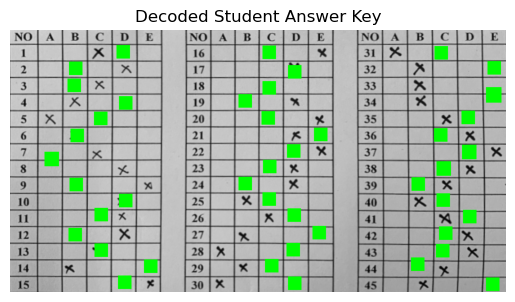

In [4]:
base64_string = "iVBORw0KGgoAAAANSUhEUgAAA+AAAAINCAIAAAAx6ILCAAAgAElEQVR4AWzBCbOV5Zn+7d953c9aezM7JjGgHeMIRhxwyL8RYzOI6XTa6iSVz9YfIulURyUgandaNAoGBCSKVjSiqChxQIS993ru63yrrqpVhZX3OPSf//mf69ev771HRGttcXHRdu99eXk5MyOCMpvNWmtAzkVEa42Smb1320BmUmxHhKTW2jAMwEoZx1FSRLiM42g7IlprEdFaiwhJwzBMp9MvvvjiyJEjJ06cWL9+/Y4dO2677baIyEzNuUhqrUmazWaZaTsihmForWXpZRiGcRx7GcpsNuu9TyYTSYDtzHQBWmuZKQmQFBHA5cuXT58+/cc//nE6nT788MO33377qlWrMjMKYDuLiwoQRZLtiJAEZBmGobUG2JbUWtMVKK21iJCUxXYUSSsrKx9//PHRo0fffvvtq6+++qGHHrr11lsXFhZ675kpyXZm2h7HsfcuaRiGiJCUmbZ777OSBZBEUbEtyXaWiJAE9ELJAkiKiMz86KOPTpw4ceHChVvL2rVrgcxUyUzAtkrMScrMsWQmkHOSWmsRIcl2ZqoAvfdxHLO4ALYptoFxHC9cuHC2ADfeeOPGjRvXrFkTEZnpuSiSKCpAFl+BYpuiAkjKArTWIiLnbEsCMnN5eXmpfP75519//fXGjRt37Nixbdu2a665xnZmuqi4SAJsqwCSANsqgIuKbUCSbUCSbUkU2xQXwHZE2P7www8PHjz48ssvLy4u3nzzzddee+0wDFlUMtM2MI5jFtuZOZvNVlZWeu9RbGdm7z0zbQO2AUm2AduSWmuSAEmZ2XvPzNbaZDIBeu+Zuby8/Pnnn3/55ZfT6fT666/fsGFDRAC2AUkR0VpTATITkBQRQGb23jMzIlprkgAVwCUKEBG2e++ZGRFAZvbeZ7OZbSAzV1ZWLly48Omnny4tLV199dXXXHPNZDKJiNbaZDJprQGZKWkYBiAzKZIiQtJsNuu9t9am0+lkMgF678AwDK01ldbaUDKz956ZtiMCiAhJMWf7yy+/fP/997/88strr732pptuWrduXZaIkATYzsxxHDMzIlprFNsU2733zPQVcs6l9w60AvTex3G0LSkze+/AUDLz4sWLn3322TfffHPNNdd897vfXVhYoNgGIqKVzARUMtO2pMy0LQloRaW1Jsk2JSJaa7YpkoDMlAS4ZObKyorthYWF3vtHH3109uzZ1trGjRuvv/766XTae7ctqZdxHHvvrbVhGCTNZrPe+zAMk8mktWY7M8dxzExAZRgGSVmiACrDMCwsLERE7912a02S7cwEImJ5efncuXNnzpy56qqrfv7zn993332Li4uZCUQEYBuQ1HvPTM0BtgHbkmwDKrYB2xFhO4ukiFDJTNtAaw0YxxGIiMy0PQzD+++/v2/fvtdff33dunV33nnndddd1wpgm2IbaK1Np9OIWFpams1mUQBJESEpiySgFcD2MAy2M9M2IKmViAAkRURmukhaXl5+9913jx07NplM7rnnnptvvnn16tWZ2XvPzNZaRACSIqK1BkgCMrP3npmApChAZs5mM9uSIoKSmbaz2JYEZGbvPUorQGZKunjx4l//+tf3339/GIZbbrnlpptuWlhYkGQbiIhhGFprgO3MlNRaAyJCkm1AUkQAtnvvgOYiYjqdDsMA9N7HcbQtqbUmySUiVGxn5srKyvnz548fP/72229v3Ljx7rvvvuGGG6bTqe3MlNRaiwhJY5E0lN57ZvbeZ7NZREiKiGEYgNaaJNsR0XvPTNuSIgKQNI6jJEBSay0ihmHovS8vL08mk4WFheXl5TfeeOPIkSPAjh07brnlllWrVkmKCIpLREwmExXAtqSIkGRbUmtNEkVSRNjOzN677cy0zT+wLSkiJNnuvbtcvnz59ddff/nll1trW7du3bJly4YNG1prQO8diJKZ4zjOZrPeu+3JZBIRkjLTNhDFdmYCtiUBtiVFxDAMkmwD4zgCrTXAtqSIAFatWjWbzVpr586d0+uvv7569epxHCMCiAjb4zjOZjMVQNI4joAkF+Yk2e5FkotKZrpIGobBdi9Aaw2wnZnjONpurUWEpCjAUC5cuPA/Ze3atf/xH/9x3333TSYTIDNtA7YB2xGRmZKAmMviAkjKOdsRYTsiJAGZ6ULJTMC2JEBSRNi+ePHi66+//rvf/W5hYeGJJ564995716xZM45jFNuSAM8BkiJCxbbmANtAREjKTBfNRYSK7SiSXJiT1Hv/4IMP/u///u/kyZMbN27cs2fPHXfc0VqbzWa2JQG2I8J2ZtqO4gLYHsex956ZESHJNuAC2GbOdkQAtjPTdkQAmWkbsA2M4/jOO++88MILFy5c+PGPf/zAAw+sW7fOBbDNnOYiApAEZCbFdhbbKsxJotgGbGembcBXoEjqvZ8/f/6NN944efJka23btm1btmxZu3Yt4AK4RIQklyiSMtNXAGwz58K3RVEBbEuKCEkumXnp0qXTp0+fOHECeLBcd911QO9dkgtgG1ABJPFtKoALV5BkWxJgmyIpMykukoDWmu3333//D3/4w2uvvfaDH/zg0Ucf3bRp02QyAVwkAbYlZbENSLKdJSIkAZ7LYlvFdhYgIgDbEWE7M20DklzGcTx//vyJEyfefvvt9evXb9u27eabbx6GwVeIiMlkEhEuvdiOCKAX2xExFEm2VQDbklprKoCkzARakWQ7M2231lZWVt59991XXnnl73//+7Zt2x566KH169erRAFcJNnOTMCltRYRY7HdWhuGAchM2xGhAkREay0ibI/j2HvPTEm2dYWIyMwzZ868+OKLH3zwwW233fbjH//4u9/9ru3MlBQRkjwHSIoI5mwDtjPTdkRQJAGSIsIlMyUBklwy0zaQmb13oLU2DMNsNjtz5szhw4fPnj171113Pfzww1dffXUWSbYzMyIkZSYgCbAN2M5M25IASRGhEhGSMpMSBZBkW5LtzFTxnKQoly5dOlHWrl17//3333rrratWrbItqbWWmRTbkiICyCKptUbJOUm2JbXWgCytNSAzJWVmRAzDAGSm7YgAXCQBX3/99V/+8pdDhw4B//7v//7ggw+uWrXKNiDJRaX3npmSKJIASZ4DIkKSC6BiOzOBiAAkZaZtICKAcRyBYRhsR3n77beffvrpt99++6677tq1a9d3v/tdQBJFUkS4AMMwSJrNZr331lpE2JZkm5KZtiW11iLCpbXmOcC2pIigSGqt2c5MSRGxtLR0/Pjxffv2rV69+vHHH9+8efPi4mJm2laJCEBSRLTWbAMRkZm2KZoDMrMX25qzDdgGbEsCMtM2oBIRmdl7j4jPP//8tddeO3Xq1OrVqx966KE77rhjcXERcIkiyTZgOyIA25IAF2AYhogAMjOKJNuSAEmUzLQtKQpgmzlJQO/973//+x//+MdXXnnllltueeyxx/7pn/5pOp1mmUwmkii2e++ZGREurbXMBFprlNZaZo7jGBHDMAC2e++ZqWIbyMyIaK1JAmxHRGaO49haW1hYWFlZeeWVVw4ePCjpySef3Lx58+rVqwEVwHZmApKAiNAckJm9d0kRIck2EAWwTbHde3eRBNgGbGsO8NzS0tIrr7xy8ODBVatW7dix45577lm3bl1ESOq9AyqZ6bnM5AqSuELvXRLQWqNIAiJCUkQA4zhKiggXSkS01nrv0+n0s88+01/+8pfpdDqOY+8dsA1kZu8dUImILJIiAoiIzLQdEb33zLTdWnNRAXrvgO3WGuAiKSIy07akcRwlRYRLREiyPQzDdDr9+uuvDx48+Pzzz2/YsOEXv/jFPffcs7CwkJm99yyAJCCLJCAiJAFZKJIiwlcAIkIS4EJRsZ2ZtiOCIsn2N998c/To0d/+9rcLCwv/9m//tm3btjVr1ozjCEgCNAdkpm3NuQCSANsRIQnwt1FsA5IoESHJBchM2xFh+5NPPjl06NAbb7xx00037dmz5+abb5Y0jqNtFSAKxTZzkmyP45iZrbWIAGxTbAO2AdsUSRQXFUCS7cwExnF866239u3b9/XXXz/yyCMPP/zwunXrbEvKTMB2ZlI0l5mAJMCFORUgM21HkWQbUOEKtjOTEhGSxnE8f/78sWPHXnvttel0umPHjq1bt65bt86F4gJIAiRFxDAMkjLTcxT/A+ZUKJIiQhJFBYhy6dKlEydOvPjii5cvX77vvvsefPDB66+/Hui9q7hQVGxTJFFUKC6SANuAJNuSABdAEmAbyEwV2xGRme+9996BAwdOnjy5devWvXv33nTTTcMwAC6U3juQmbZjjmJb32Y7M21LimK79+6iAkjKYpsiCei9f/rppy+99NKRI0euvfbaXbt2bdmypbVmG8giaRiGiOi92wZ677ZVXADbQGstImxLigggMyVFhIukiLANxBUA2621paWlN99888CBA5988smuXbt27ty5YcOGiHABJDFnO0oWICIys/eemZJaa4BtiiQXzWUBPAeo2JaUme++++6BAwfeeeedH/3oR7t27brxxhtdABXbXEFSZkoCMhNwAYZhAGxHBCApIgDbUbIwp2KbOUlLS0vvvPPOCy+88P777//zP//znj17rr322l4A2733zARsS2JOku3eOxARgG1JtgGVLHybbcBFBVBprUnKzK+//vpwufbaa3fs2HH77bcvLCwAKrYlRQTFNhARgIuK51prQGZKAmxLGoYhMymZCUSE5yTZBiS11jLzwoULx48ff+aZZy5duvTkk09u27ZtcXFRxTZzkjKz906xrTkgMwFJEQG4UFRcJAEugArQewdaa0BrDfjrX//61FNPvffee9u2bfvpT3/6ve99r/dOkRRFku1xHKP03oHWGmAbyEyKi/7BOI6AJNu9d9sqFElAZkpqrS0vLx87duypp55as2bNE088sXnz5lWrVvUCRMlM21FsA5IyE5AE2AZUbGdm7x2IQokISYBtQBJXyExJWVpr58+ff/XVV0+cOLF+/frt27dv3rx5YWEBcAEkUSQBkjLTNsU2kJkR0VoDJEWR5JKZzGUBJFFcMhOIiNYa8MUXXzz33HMvvfTSHXfcsXPnzptvvrm11nsHhmGQZDsigCzMDcNgu7UWEczZHsdRUmsNkGQ7C2AbiAhgGAbANsV2ZgLDMGTmkSNH9u3b13t/8skn77777tWrV2cmYJtimzlJgOeySKJkJiApIiQBkiIC6IUiyYU5lYiQBKysrLz++uv79++fTqc/+clP7rnnnjVr1kiKCBdJtimSbPfeM1MSRRIgCbDde5dkWyWKbUDSMAy2e++2JWWRlJkRAUhaWFj49NNPdeLEicXFxZXSWpME2O692wYkRURm9t4jQqW1liUisgAR4SKJOUmZGRG2JQGZabv3DrTWbEcEkCUiJNmeli+++GL//v1//OMfr7/++l/96ldbtmyZTCa9AC4qLsxFhO3MBGxnZkRIsg1EhEtEZKYkwDZFBchM25JsAxFh+5tvvjl8+PBvf/vbNWvW/OxnP3vggQfWrFkzjiNgWwVQAVz4NhcgIiQBtpmzDXhO3+ZCyUzbwLlz515++eVTp07deOONu3fv/sEPfgD03gEViiS+TaUX21E8B6gAtjPTNiDJNnOSIsIFsC1pHMdTp07t37//4sWLjzzyyIMPPrhhwwbbgCTAcyqApMy0LcklM21LAlSAzLQtKeZsZyYgieI5QAUYx/H8+fPHjx9/7bXXJpPJo48+evfdd69du9YFkATY1lxEtCLJVwAk+QqZaTsiVCguQERI8pyK7YhYWlo6fvz4Sy+9tLy8fP/99z/wwAPXXXcdYFsF8FxESLLNFVT4NkmAbUCSi6TMtK0C2AYyM0pm2h7H8b333jtw4MDp06fvv//+xx9/fNOmTa0128zZ7mUcR9uTyWQYBiAzAduAJOZcgNaaiq8ARISvwJwkwPb58+cPHTp05MiR66+/fu/evZs3b6ZI8lxrTVLvHZDkom/rJSJUgNZaRGSmbUm998y0Lcl2ay0igMyUFBGUS5cuvfPOO88999zZs2d37ty5Y8eOtWvXRkRmukSEJOZasd17z0xAkm1A/8BzgCTbmQlEhCTbmQlIokRE7/3MmTPPP//8W2+9tXnz5j179tx0002AS0RIsg24UDJTEpCZLoCk1prt3jtFBbDdWpPkkgWIKwC9d9tLS0vvvPPO//zP/5w9e/YnP/nJ7t27N2zYMI5j791lHEcgIjwnKYrtzAQkAbYlAS4U24ALxTYgyTZzklprkjLT9qVLl44cOXL48OFrrrnmJz/5yW233RYRzNlWsZ2ZlIiQlJkUF0kR0VoDbAMukoZhyMyIoHgOsB0RgKQomXnhwoXjx4/v27fv8uXLv/jFL+69997JZNJaiwjANmBbEjCOo23AtqSIkGR7HEdJESHJNiApIjITkMSc7cwEVCIiiyRKRABnzpx55pln3nnnna1bt+7du3fjxo2Z2XsHYk6S7d47EBGZCUQEYFuS7cyUBNimSIoCjOMIRITt3ntmSmqtAZkpiSKptba8vHzixImnnnpqcXHx8ccf37Jly5o1a2z33oGIkJSZtiNCkm1AUmbalgRkpm0V21kkRYQkSkRIcmFOxQXIzN77MAyff/75q6++euLEifXr12/fvn3z5s3T6VTFBVCxHRGSskiyDUiyDUiyHUWFYhuQlHOAJIpt5iKitWb7/Pnz+/fvP3z48B133LF79+5bbrlFUu89ImxHhO2IALJEhCTbwzDYjgjbkgBJgG2uEBGZOY6jJNuAJNutNcC2ikvvvbUWEUePHt23b9/S0tLPfvaze++9d/Xq1bYz0zYQEbZ1Bdu9d9uAJECSrwCoAJkZEZJ675lpW8VFEmAbiCIpM22fOHFi3759rbVHH330nnvuWbVqlaRhGCTZBmxLomTmOI62JTEXESq2M1NS7x2Q1IrtzASGYchM24DnWmuZCUgahmE6nZ47d07Hjh1bvXr18vLybDZrrQGttd67bUkuKuM4ArYlDcMAZGZE2M5MwDZgWwWQBGSm5mz33rMArTUV27132xHRWgMmk4mk8+fP79+//8UXX7zhhht+9atfbdmyZRgG2713wHZmMqc524ALkJm2I6L3bnsYhtZaZtqWZFuSbUmAbeYykzlJEQF8/fXXL7/88u9+97t169b97Gc/e/DBB9esWTOOo4skQBKgORdAEpCZLoBKREiyDWSmbeYiArANSAJsA5KAzLSdmZ988smhQ4dOnTp144037t69++abbwYy03ZEqFA8JykK0EsUim2KJMBXoNjOTKAVoPeemZpbWVl5/fXXDxw4sLy8/MgjjzzwwAMbNmygRARztiUBtoHMtC2JYjuLim1JFNutRETOUSQBLiqApHEcz58/f/z48T//+c/DMOzYsWPr1q2rV6/OTNsRoWIbkBRXkETxHCDJds4BEdFaA2xLAlxUbGembRWgtba8vHzixIlDhw5dvnz53nvvffDBB6+77jpJEdFas53FJSIk2VYBbKswZ1sFcJFkm+ICqAC2e+8R0VrLMo7je++9d/DgwdOnTz/wwAOPP/74pk2bImIcR0ASJTN777PZLDOHYWituWgOyEzbkgDN2c5M2yqZaTsiKLYBSS4RAfTez50797//+79Hjx694YYbnnjiiS1btgAqmUmRZDszAdsU25IAFRdJgG1JrbWIAFwys/duG7DdCpCZKpRLly69++67zz///AcffLBr167HHnts9erVmWlbEmBbEqASEZJsZ6Ztiq4AaM52ZtoGJNnOTM3Z7r3bpkSEpMz86KOPXnjhhVOnTt1xxx179uy58cYbJblEcQFsS3KhZKZtQFJESMrM3rttlYhwaa1FhEvvPTMlRQQQEa0125nZe19eXn733XdfeOGFDz/88LHHHtu1a9e6det67y7jOPbeJbXWPCcpCpBFEmAbkARkkWRbkouKbUmAbcBFUkRIsg1cvnz52LFjhw8fXrdu3aOPPnrbbbdFBEWFkpm994iQBNiWFBFAZvbeY04SkJm2AUkRAUSEJCCLC9BaiwiKJNtfffXV0aNHn376adu//OUvt27dOp1OW2sRYTszJdkGJPXeM5MSEZKAzBzH0XZEALYlDcPQWrPde48IzWVm7x1QATLTtiTbwDAMEfG3v/3tmWeeOX369I9+9KMnnnhi06ZNvQCttYhQsZ2ZgKTee2a21iJCxUWS7cyUBKi01iSN4whIsp1FEuAiKSJUImJlZeXEiRP//d//vbCwsGfPni1btqxevdo2EMV2ZgKSANuSIiIzbUcEkJm2JVGyAJIigiKJIglwkQTYzkxJvffMnE6nX3755Z/+9Kfjx4+vX7/+kUce2bx583Q6VQFcVGwDEZGZgG1AUkRIymJbJYqkzAQkAVlsAyqZCagAKr338+fPP/vss4cPH7799tt379596623ttYyE7DdWstMSbYz03ZESIoCZKakiJAERIQkyjiOgCSg9x4RmWk7M6NIsp2ZkjzXWpP0+uuv79+//+LFi3v37r3//vtXr16dmbYlRYQk28xJsp0lCmCbf6DSe5dkuxeKJEpEALYBSRFhOzOBEydO/OEPfwAeffTR++67b3FxEVhYWIiIzLQtCZAE2O69uwCSIoI5SbYlZaZtSa30Yru11nun2AYiYhiG3rvtzJyUTz/9VEePHl29evXy8nLvXdJsNptOp7YlAZlpW2Ucx2EYeu+ttYiw3XvPTEmZCfTeW2tRJGVmRGQmYDsigCy2IyIzVWxnpm0g5oZhAM6dO7dv375Dhw5t3Ljx17/+9datWyOi9z6Oo21JlIgAJPXeJeVcRLTWbAOSgMyMCJfWGjCbzQBJEQHYBiQBmWlbBbANXLx48dVXX/2v//qvtWvX/vznP3/ggQdWrVo1jqNtSYAkwLakiJAEuEiiSLJNkRQRQF5BcxEBZKYLRRIQEZJ67ysrK+fOnXv55ZdPnjy5cePGvXv33nLLLUBm2qZIYi4zJUWECpAlCqDiIgnIwhV6AYZhiAjbmWk7IgBJKysrx44de/bZZ5eWlrZv3/7AAw9s2LAh5gDbklyAzARsq1BsZ9GcbcAFaK1FRGbalgS4ALYBFZdxHD///PPjx48fPXq0tbZ9+/a777573bp1FEmAJNsqEdFak0RRyUzbfFtmukREa81FEpCZtiUBtikqQGvt8uXLx48ff/HFFy9fvnzvvfc+9NBD3/nOd1prmWmbOduAim1JgCSuIAmwDUgCbAOSbAOSPKcC2O69S2qt2QbGcfzb3/72/PPPv/nmm9u2bdu7d+8NN9wQEb1324BtlV4ASbYzExiGISLGcey9R4Qkvk2SbaC1Jmk2m/XeI0JSRACZCUSEbSAibH/88ccvvPDCsWPHvv/97//0pz+98847bQMRAWSmbSAzVTLTNkWSS0RoLjNtS4oISYDneu8qtoGIAGxrDrh8+fK777578ODBM2fO7Cxr1qzpvQMRYTszAdsR0VqLCEm2mbMNSIoIFRdJgO3eu21JtgFJzHlOUkTYzsyzZ88ePHjwzTffvOuuu/bs2bNp0yYgSxTbgCTbugJgOzPHcZQUEbYlAbZVbPfebU8mk2EYeu/jOPJtESEpM20DKysrf/3rX5977rkPPvjgscce27Vr19q1a2ezmaTWWu99NpsBrTUV25kJRIQkwDbFRRLgIsm2JMA2YBuQRImI1prtzLQtqfcOLC8vHz169E9/+tO6desee+yx22+/PSJsS2LONiAJkGRbkm1AUmb23iVFBBARQGbabq1FhG3N2c5M25IA2youESHpq6++OnLkyO9//3tJv/zlL++///6FhQVJEWEbkJSZtltrWSiSANuZ2XvPTElAZkoahmEymWSJorneO3O2x3HsvbfWogCSPvjgg2eeeeb06dM/+tGPnnjiiU2bNtnOTNsR0VqLCMB2lojoJSJaaxGhYhsYxzEzI0KSbUmttYjovQOSANu998yUBNgGJEUEIGl5efnkyZO///3vFxcXH3/88c2bN69Zs8Z27x2ICBdAkm1ABbAdEZIys/dOUclM20BESKJIsh0RgG1AJTN777aBzJxOp1988cWrr756/PjxtWvXPvLII1u2bJlOpxTbgG1Akm0V25TMlDQMQ2stM3vvmUmJiFYyE5DkwpxtSVkokiJCUu/9/Pnzzz777Kuvvnrrrbfu3r371ltvnU6nQGYCrTUXwAWIYru1lpmSWmtAZkoahkFS730cR9utNdvjOEoCbGdmKxFhexxHwLYkiqRTp04dOHDg888/37lz54MPPrhmzRoXSVGytNZsSwJsAyq2M7O1FhGeAyKCYrvPuVBUAF0BsC3pjTfeePrpp1dWVh555JGHH354/fr1wGQykZSFOUmA7SxAa01SFknDMNgGbKtEBDAWim1JtnvvwGQyGYbB9mw2sz0tZ8+e1fHjx4dhmM1mtmezWUQMwzCdTsdxXFpayszWmqTeu6SFhYXMHIYBWFlZWVpaunTpEpCZvffW2tq1axcXF1trQO9d0sqcbWAYhoWFhcXFxdbabDaLCKD3npm2NddaG4ZB0ieffPLMM8/86U9/2rhx4y9+8Yu77rprGAZgZWUlM1UiQpJtSZkpKYvtVmxnZu/dtqRhGIDeeysrKyu9d6C1BtgGVGxTWmuSbGfmN998c+TIkd/85jdr1qx58skn77vvvoWFhdlsJqm1ZluSbYpKREjqvY9lMpkMwyAJyEwgM4HWmiQXSmba5gq2AUlAay0ixnFcXl7++OOPDx06dOrUqRtvvHHv3r233HJLRGRm7902oELJzCiSKC5RbPfeV4rt6XS6sLAQEZKyAJIys/eema3YzkzbEWE7IlZWVo4dO/bss89eunTpn8tVV101jmMUQBJXsE1RATITkGS7F0mtAJlJsZ2ZESHJdhZJFBWX3vsXX3xx/Pjx1157bRiG7du333333WvXrpVEsQ3YjrnWmjdBffIAACAASURBVCTbkiJCEqBiOzNtM2dbEpCZtiUBvXfbgCQXzQERcfny5ZMnT7700kuXLl26++67H3rooRtuuCEiPCcJsK0CuGgOsA1IAlwotlUokmwDtgEV2713FUDSOI5nzpx5/vnn33zzzW3btu3evfs73/lOa802kCUiJPXeKZkJtNYiwvY4ji6UKIDt3rskl9baMAyZ2XuPCCAzAUkRAfTegdYa8PHHHz/33HNHjx698cYb//Vf//XOO+90kQRkpm3AdkQAs9nMtiTmJEWEJIqKi0pmUjJTUpaIaK1FhG3ANmVlZeXdd989cODA3/72t3/5l3/ZuXPnunXreu+2W2sUSbYzcxiGiJAEuKjYlhQRkoDMtC0pIoDee2YyJykzAUkuQCuZ2Xs/c+bMH/7wh7fffnvr1q179uzZtGmT7cwcxxForUWEJBdJgArFc5RhGFprgEsWScMwAOM4uuRcREwmE0mZGRHA5cuX33rrrYMHD549e3bnzp27d+9ev359712l9z6bzYDWmm1JtjMzIlprkoAskiJCJQslMwHbmQlEhEqWoQC9ZKZtScvLy0ePHn355ZfXrl372GOP3XnnncMw2KZkpu2IsA1Iaq1lpu2IACTZ7r1LiojMlBQRvXdgGIaIsB0RmQnY7r0DEQHYlhQRgG3KhQsX/vznPz/11FMrKyu//OUvt23btri42FqLCNsqmWm7tWY7MwHbmekiqfeemZIoklprwzBkJtBakwRIysxxHCOCYjtLay2K7Yj48MMPn3766bfeemvLli179+7duHGjJEpEDMMQEZJs997HcYwI25kpqbUWEZJsA5LGccxMSRGRmcAwDMA4jrYlRQQwjmNmApIyE4gISS7Ly8unTp3av3//MAw7d+6866671q1bZzszo2SmbUkugAogKSJs9wJEBJCZkiIC8BwQxXOSIkJSZvbeXXrvCwsLX3311eHDh48fP7527drt27dv3rx5YWHBhTnbgG0VSmb23m0Pw6BiW5LtzASi2I6I1hqQmbYptiXxDyKi937+/PkDBw68+uqrP/zhD3ft2nXHHXesWrXKdu/d9jAMQGbazkzbkiJCUma21oCIaK1l5li++eYb27PZbBiGyWSyevXqYRguX77cCnMRAbiojOPYWpMEvPHGG/v37//ss8/27Nnz//7f/1u7di1gOzMlAbaBiLCtOUBzwGQyAcZxnM1mmSkpIiTZzszee2a6MCfJBdC3AadOndq3b9/S0tL27dsffvjhq666qvc+nU6B3jv/fzJzNpuN4yhpGIbJZBIRWXrvtgEVICIy07akzAQkAeM42p5Op621cRyj2B6G4bPPPtPRo0dba7331to4jpkZEYuLi19//fXHH3/86aef9t4XFhZsTyaTH/7wh+vXr2+tZebFixfPnj37zjvvnDt3rrW2sLBwzTXX3Hbbbd///vcXFxcz85tvvvnoo49Onjx57ty53vswDCsrKxFx/fXX31yuvvrqYRjGcXTJTNtRhmFordk+d+7cvn37Dh069L3vfe/Xv/71Pffc01rrvWdxiQhJtiMiS0RIygK01iRdunTp73//+/Ly8ne+852rrrrKc8A4jiq2AUm2JdnOzCieu3z58p///Off/OY3a9as+fnPf37fffctLi6O4whoDrANaC4zv/rqq/fee+/06dPffPPNdDpdt27dMAwrKyuXLl3KzOl0un79+u+Xa665ZhgG25Teu23N2aZEhEpmfvjhhy+++OLJkyc3btz4+OOP33LLLa21zOy921YBbAMqgCTmMnNpaenL/48tOH2qMk/vx3+9r/s+53BYxQVZVGwXpEFbQbQFcWFRW6d7JpmZTjKVPEnVpPJP5XGqkvR0xp7udkNpxRXEBlQUREVWWQRkPZxzf673t+pTRZWp3+/1WliYmZn58OHD8vLy+vq6mYVhmJ+fX1RUlEwmARQUFGzatCkIAuecmQFQj6RtEJF4PG5mz58/v3LlytzcXENDw8mTJzdv3kzSzEQEnngARERVSS4uLk5OTi4vL8fj8by8vGQyCcDMoijKZDIAkslkdnZ2PB4Pw1BVzcw5B48kAH5CROBxw8LCwtOnTx8/fgygoaHh0KFDubm5IkJPVQHQU9UwDIMgEJFMJrO8vLy0tAQg34vFYmYWRVEmkzGzIAhisRhJVQ3DUETMjKR53GBmIqKqYRgCICki6+vr/f39Dx48SKVShw8frqur27Ztm4hwAwD+X9igqgBEhJ6qAjAzkuIBkE+QBCAiJOGRFBEzExEAIgIgk8m8efPm+vXrr169OnbsWEtLS3FxcRAEJKMoymQyALKysmKxmHiRZ2YASEZRpKphGAIwTz0RMbMgCEim0+n1DWYWi8Xy8vKSyWQQBABEhKRzzjz1Jicn29ranjx5UlZWdvHixaqqKnqqKiL0RISkiABwzpEEICJmRlI9AOoBMA8ASTODJyIknXMkgyCIxWIi4pwjKSIARARAKpUaGBi4cuXK5OTkuXPnWlpacnNznUcSgIgAEBGSAFQ1DEOSqVRqfX3dzOLxeBiGZkbSeQBisVg8Ho/FYqpKMpPJkFRVAPRERFVJOucAxGKxIAjMzDk3PDx85cqVV69e1dTUnD9/vrS0NPKccwCCIMAG8QCoKgDnnIgAEBFVDcMQwPr6+tLSUiqVisfjubm5WVlZJOFFUWQeSQDiARARkgBEhOTa2trg4OCtW7eGh4dPnz791VdfFRYWRlEkIiTNLPICD4CZkTSz9fX11dXVIAiSyaSqmuecI6mqiUQiHo8HQUDSOUfPzOCJp6oAVJWkeQBIAkin0w8fPrx7925+fv6ZM2c+//zzRCIBz8yccyQBkIQnIvCiKFpfXzcz9QCQTKfTkeecC8MwmUzGvTAMnXPyCZIAxFNVEXHOiYiqLi4uPn78+K9//auZffvtt3V1dclkEoB4JOGZB4+keSIShqGIRFFEUkQAqKqIAAiCgKSZqaqIkBTPOQePpJlhg6rKhrGxsatXrw4MDFRVVbW0tJSVlakqySiK1j0AqmpmQRDEYrHs7GxVJemcW11dXVpaSqVS6XTazLKzs7ds2ZJMJlU1FouJyPLy8szMzPv37xcWFkQEXnZ2dlFR0datW3NycoIgEA+ec87MVldXnz17duPGjUQi0dTUVF1dnZubS9LMVDUIAnri0RNPVcMwJGkeSQCpVGpxcVFE8vLysrKygiAgKSJmRlJVSaoqAJIiAo+emTnnzCwWi83Pzz969Ki3tzcnJ6exsbG6ujorK4uefAIASREBQHJ9ff39+/cjIyOLi4uxWCwrKysIApKZTCadTptZPB4vLCwsLi7Oz89PJBLZ2dnwRMQ5Rw8ASREhCY8kvA8fPty+ffvOnTtlZWWtra2VlZVZWVkiEkWRqgZBYGYkzYMnIgBUlWQQBADW1tZmZmYmJibm5uaWl5ezs7NJRlEUhuH27dvj8fjKykpZWdn27dvj8ThJMwOgqiRFBICImFngkXz69OnVq1dnZmZaW1vr6+vz8/PNIykiJGVDEAQASK6urk5OTo6Ojs7PzwOIx+NBEKTT6aWlpVQqlUgkiouLS0pKNm/enJ+fr14QBABImhkA55x8giQAVYUnIv39/T///PPq6urJkydPnDixadMmMwuCAICZkQQgIiRFhB6AhYWFsbGx5eVl55x5mUxmdXVVRKIoUtV1T1VLSkpqa2sLCgpUNYoiMwNA0swAxGIxkuqZGcl4PD47O4vu7u54PB5FEYBMJqOqsViM5Orq6suXLzs7O/v7+5eXl+PxeFZWVnNz8+nTp7ds2WJmy8vL7969e/To0ZMnT9bW1urq6qqqqvbt27d161ZVnZmZ6e/v7+npeffuXWFh4f79+wsKCtbW1iYnJ9+/f6+q1dXVjY2NZWVlYRhGHj3nXBAEiUQiCAIRmZ6e/vnnnzs6OkpLS3//+98fOXIkCALnnJmRNE898cwMgKqKSCaTiaIoDMNYLOac+/DhQ0dHx9zc3PHjx6urq8MwJOmcEw+emYkIAJIA6IkIAPNEJJVKPXny5Pvvv08mk998801NTU1WVlYURfBEBICIkAQgIiTVS6fTMzMzL1++7Orqev369fr6+qZNm3bs2FFcXLy+vj4yMjIzM5NIJA4cOHD8+PGKioqcnBwAJEWEpGwgKRtUFYBzbmxsrKOj49mzZzt27Dh//vy+ffuCIHDOmRlJESEpIgBkg6qKCD0z+/jx4+Dg4IsXLz5+/JhMJjdv3pybmxuLxVZWVubm5paWlqIo2rp165EjR/bs2ZOdnQ3APPVEhKSZOefMLAgCAIODg1evXp2enj5x4sTJkye3bt1qHkkAqmpmAFTVPBFJpVJjY2MDAwODg4PT09POuTAM4/F4dnZ2GIZmlkwmt23bVlpaunPnzuLi4uzsbBExT0QAiAg9EQEgIgDoOefm5+f7+vq6u7uDIGhsbPziiy9ycnLMjJ6qAqCnn4ii6OPHj++9hYWF9fV1kqoaBEEsFiOZSqVWV1edc1u2bNm/f/9nn322adMmAFEUOedEBICZkRQRVQ3DUETMzDmXSqWeP3/+6NGjdDpdU1NTV1e3bds2ACTNjJ8QjyQ2iAgAESEpIvBIyv9FUjaoKgCSIkISgIiYGQARIQkgk8kMDQ1dv359aGiorq6uqampuLg4FouR/Pjx49u3b4eGhubm5oIgyMrK2rx5c0VFRVlZWVZWFsnFxcVXr14NDAwsLi6qalZW1vbt2/fv319WVhaPx0VkZWVlYmJibGxsYmJifn5+bW0tiqJYLFZSUlJZWblnz56CgoJYLCYitkFVwzAcHx9va2t78uRJWVnZxYsXq6ur6QEwDx43mJmqAjAzkgDCMAQgIuvr65OTk1EUFRcX5+bmqipJMxPPOWdmAEiqahiGImJm2EASQCqVGhwcvHr16sTExPnz55uamnJycswjKZ8wD0AQBFEUTU9Pj4yMzM/Pi4iqBkGgqs4zM1VNJBJFRUW7d+/etGkTADMDwA3wSDrnRCTwRITku3fvrly58urVq8OHD58/f76kpCSKIuccSQBBEAAQEZIiAkBESKpqEAQAnHNra2vT09Pv3r2bnJz88OHD3Nzc2tpaLBbbunXrZ599tnPnzkQikZOTU1RUFI/HoygSEQDiARAPHsm1tbWhoaGbN28ODw83NTWdP38+Nzc3iiIAJM3MeUEQhGEIwDlnZuvr69PT0+Pj4zMzM5lMhqSZBUEQhqGZra+vi0heXt6OHTvKy8s3b94MIIoiESEJgCQ8kiJC0szgiYiqplKp+/fvd3R05Ofnnz17tqqqKhaLiYiqAjAz8UiqKgCSQRBEUTQ2NjY+Pr64uJhKpdbX10k658wsk8k450iKSCKR2LZtW1VVVVlZWRiGQRCICEkRAUBSPJLiAVDVpaWl7u7uv/71r1EUffvtt0ePHs3KylJVEeEGACJCEgBJMxOPpIgAMDMRwQYRIQlARMwMgKqKCEkRIamqIuKcIwlAVUWEJAD1xsfHr1y5MjAwUFlZ2draWlZWpqqZTGZ9fX1ubm58fHx0dHR2dtY5l5ubu2fPnqqqqm3btsXj8fX19enp6dHR0ZGRkcnJyby8vIqKisrKysLCwjAMM5nM5ORkf3//q1evMpnMjh07CgoKVPXDhw/v378XkZ07d1ZUVJSXl2dlZZkHgN7q6mpvb29bW1sikWhubj548GBOTo7zAIRhCE88M6MHIAgCACTNTERIOuempqZev37tnKuoqCgpKYnH4yJiZiRFhKR6IkISgIgAIGlmmUwGQBAEYRjOzs7ev3+/t7c3Ly/v1KlTVVVViUSCHgDZAEBESKqqmWUymaWlpZmZmbGxsdevXw8PD6fT6by8vF27dm3evHl5eXlycvLjx485OTm7du2qqanZs2dPMplUVRExT1Wdc0EQAHDOAQiCAABJEVlcXLx161Z7e/uOHTtaWloOHDiQTCYBmJmIAOAnRASAqoZhCMA5JyKzs7NPvfn5+dzc3B07dhQVFSUSifn5+bm5ubW1teXl5TAMGxsbKysrs7KyRMTM4JEUEQCqamYAVBVAf3//tWvXpqenz549W19fn5+fT9LMRISkbABgZiISBAHJtbW1iYmJvr6+7u7uiYmJTCZTVFRUXl6em5ubSqXm5uZSqVRubu6BAwcOHTpUXFyclZUVi8UAOOfoOecAiAhJEQEQePCePXv2448/Li4uNjQ0nDhxorCwEEAYhvREhJ5sIGlm6XR6YWFhfn6+r6/vxYsXi4uLiURi3759R48eTSQSAKampvr6+sbHx3fv3v3HP/5xy5YtAJxzZgbPzAAEQUAvCAIAIhKLxaanp/H48eNEImFmJKMoUlXxAKyurr548eKHH364ffu2qiYSiQMHDvz+978/duxYQUGBc25paWlgYKCtrW1kZORf/uVf9u/fX1BQYGYTExPd3d2PHz+empoqLS1tamrav39/IpHIZDITExPd3d09PT0ATnq7du0Kw9B5ZuacU9VEIqGqJKenp3/++ed79+6VlZX9/ve/P3z4sKqamXjmARARkgDMDICqOucymQzJMAxjsRiAN2/e/Pd///fMzMypU6dOnz69ZcsWVY2iiB4AeiICgCQAMyMpIqpK0sxIplKpJ0+efPfddzk5OV9//XVtbW0ymXTOASApIgDEAyAiJNUTkdXV1bdv37a3t9+7d+/jx487duw4fvz4iRMn8vLyXr9+/eDBg4GBgTAMDx482NjYWF1dnZOTYxvk/w8AVY2iaHR0tKOj4/nz52VlZRcuXNi7d28QBGYmItwATzySAMSLomhubq6/v//Ro0fT09OlpaWHDh3at2/f5s2bwzBcXl4eHR199uzZq1evNm3adPr06aqqqpycHAAkzQyAqtITj6SqRlH08uXLa9euTU9Pnzhx4vTp09u2bTOPpKoC4CdERFVJplKp6enpnp6e+/fvv3nzJgzDvXv3Hjt2bNeuXUtLS2/evBkZGUmn0zt27Pjiiy8qKys3b94sImYGQDZwAwARASAiURTNzc319vY+fvw4CIJTp04dPnw4JyfHPGwgKRvUI5nJZJaWlsbHx58/f/7ixYuFhYW8vLyKiorPP/9869at6+vrY2Njg4ODmUymqqqqpqZm+/btQRDYBpKqCkA8VQVAb3V19enTpw8fPkyn0zU1NXV1ddu2bQMgImZGTz5BEp6IkBQRAOIBkE/QA0BSPJKqCo+eeCRVVURIikgmk3n9+vX169cHBwePHj3a3NxcXFwci8UApFKpmZmZV69edXd3DwwMrK2tFRYWHj16tKGhYffu3fF43Dm3uLj4+vXrrq6uhYWFioqK6urq0tLS3NxcVZ2fn+/u7n706NHS0lJJScnevXs3bdq0trY2Pj7+5s2bKIoqKyuPHj26e/fu3NxcAM4DEATB5ORkW1tbd3d3WVnZxYsXq6qqRIQkAPNERFX5CQAiQk9VAQTe+Pj4vXv3nHNffvnlzp07Y7GYmTnnxDMzEQEgIgBExMxIqmoQBABEBMD6+vqbN2+uXbs2MjLS2tra1NSUk5NjZs45EVFVETEzemYGIAgCEVleXn7//n1/f393d/fExEQsFisrK9uzZ092dvbc3Ny7d+8WFhZKS0vr6+sPHz68adOmIAhEhBvgmUdSN5jZ8PDwlStXBgcHjxw5cuHChZKSEuecmZEEoB4AeiISBIGIkFRVEfnw4UNfX193d/fU1NT27dsPHz68c+dOVV1aWnr37t3Q0ND8/HxeXl5DQ8OxY8eys7OdcyQBcIN68MxsbW3t1atXbW1t7969a/VycnJIigg955yZqQfAPOfc4uLi6OhoX19fb2/v3NxcPB7fuXNnZWXl5s2bl5eXR0dH379/n0wmDx06VFNTs3379jAM+QkAqmpm9EQEAL1YLLa+vv7w4cOOjo78/PyzZ89WVVXFYjEzg0cSAEkzU1URARAEgYgsLy8vLS29e/fu0aNHz549W11d3bRpU11d3d69e2Ox2Nra2tjY2Nu3b8MwbGpqOnLkSDKZBKCqJM1MPkFSRFQVAMnl5eWenp7//d//jaLo22+/rampSSaTqioiJM2MpIgAEI+kmYkIAOecmQVBICIAVBWemYlHT0QAiAhJACRVVUSccyThqSpJEQEgIiMjI1evXh0aGqqqqmptbd2xYwcAMwPgnHv//v2DBw8ePnz4/v17Vd29e3dra+vhw4c3b94cBEE6nZ6enu7r6+vv79+zZ09tbW1JSUksFouiaGJi4vHjx7/++msqlaqurq6rqyssLAyCYG5urr+//9WrV6urq2VlZXV1dfv378/NzSXpnDMzEVldXe3r67t582Y8Hm9ubj506FB2drbz9BMiYh5JEQGgqs45EVFVEVHV9fX1oaGhzs7OlZWV48ePV1dX5+TkkDQzEVFVkqoKgKR48MxzzgEQkTAM5+bmHj582Nvbm5ub29jYWF1dnUgkRISeiJAUEQAiQhKAiJiXSqVGRkbu3bv36NGj5eXlkpKSxsbG6upqki9fvvz111+npqZisdihQ4eamprKy8uTyWQQBM45M1NV5xwAVRUReOKp6uLiYltb282bN3fu3NnS0nLgwIGsrCxVFRGSAMwMAEn5RBAEYRhmMpnJycnu7u7Ozs75+fndu3fX1dUdOHBg69atIvLx48f3798PDQ29ePGCZGtr68GDB5PJJEkzg0dPVcUDoKoi8uLFixs3bkxNTZ0+fbqhoaGgoMDMuEE8eCKiqiLinCO5uLj466+/trW1vXz5MpPJfPHFF83NzZWVlQDevn3b1dXV39+fTCbr6+vr6uqKi4uTyaR4AEg652QDSQCqGngi0t/f/8MPP8zPz9fX1zc2Nm7evFlVATjnAIiIeSKiqgDMTERUVUQWFhauXbvW1tY2Ozubl5d34cKFb775JplMOueWlpa6urq6u7sLCwu//fbbwsLCIAhImhkAESEpIqpqZgBERL14PD49PY2urq6srCx6zjnxVFVEAIyNjV2+fPn7778PgmB5eTk3N/fkyZMXL1784osv8vPz0+n0yMjIL7/88vz583//93//7LPPAIyPjz969OjOnTsjIyNbtmy5cOFCU1NTQUEBSTNbWlp6+vTptWvXnj59um3btubm5oaGhp07d8ZiMeecmTnnVDUMwyAIzOz9+/dXr169f/9+WVnZH//4x+rqalUFYGYAVJWkc87MSAIgqaoi4pwzMwDxeFxEVlZWHj58+N///d8LCwvHjh27dOlSZWVlGIbOOQBmxg3wSAIwDxvora2tdXV1ff/99zk5OV9//XVNTU0ymTQzAGYmIvBEBICIAFBVACKSyWTevXt38+bN27dvz8/Pl5eXnz179ty5c0VFRcPDw+3t7b/88svMzExpaempU6dOnz69Y8cOEXEeSREBIB4AEQGgqplMZnR0tKOj4/nz57t27Wppadm7d28QBCQBiAg9EcEGeiKSyWRmZ2f7+/sfPHjw5s2b7du3NzY21tTUlJSUZGVlAYiiaGlp6eXLlw8ePHDOHT9+vKqqKicnRzzzAIgHT0QAZDKZgYGBa9euTU9Pf/nll2fOnNm2bZttgMcNIgLAzFQ1CIKVlZWenp7r168/e/YsFosdPXr00qVLe/fuTaVS7969e/jwYW9vbyaT2bdvX319/eHDh/Pz8+mJCEkRISmfUFUAURR9+PChp6enq6tLVRsbG48cOZKXl0fSzFQVgGwgKSKqCoCkiJCcm5t79OjRnTt3Jicnt27deuLEifr6+h07dpCcmZl5+vTp6OhoSUnJoUOHiouLwzAkCUBESKoqAHoioh6AlZWVvr6+Bw8epNPpI0eO1NXVbdmyBYCIcIOIwKMHjx48kgBkAwARISkiAESEG+CJCEnxAIgIABEhCSCdTr9586atrW1gYODIkSPNzc1lZWVhGIoIyUwm8+7du7a2ttu3b3/48CGRSOzdu/fkyZP19fU7d+4Mw5Dk5OTk3bt3P378ePjw4YqKimQyaWaLi4vPnj27cePG2NjYnj17Tp48+fnnn+fl5TnnpqenHz16dO/ePRE5dOjQiRMnDhw4kJuba2ZRFJEMgmB2dvbWrVudnZ3FxcUXL16sqqoCIBvMjCQ8emamqiJiZuqRBGBmfX19P//8s5k1NzfX1NTk5eWZmXNOPJIiQlJEAIgISXiqCoCkiKTT6Tdv3ly/fn1kZKS1tbWpqSk3N9fMMpkMyTAMRcQ5RxKAiGCDcy6VSr18+fJvf/vb48ePE4nE0aNHm5ubd+7cOT09ff/+/c7Ozkwmc+TIkZaWlqqqqtzcXAD0RAQASfNIikgQBKpK8u3btz///PPg4GBNTc2FCxdKS0udc/REBICqAiApIiRVFYCZicjHjx+fPn169+7d4eHh4uLiM2fOHD16tLCw0MzW19fn5uaGhoaePHkyNTXV2NjY1NSUnZ1tnogAoKeqQRCICACSa2trr169amtrGx4ebvFycnLEMzMRISkiAEQEgHki4pybm5vr7u7+6aef3r17l5ubW1tb29TUtHv37nQ6PTQ09OjRo1evXm3atKm2tvbo0aPl5eWJRMI8kvDoAeAGEYnFYmtrax0dHffu3SssLGxpaamqqorFYmYGgKSIABAPAEkAsVhMRCJveHj42rVr7e3ti4uLu3bt+ud//udjx47F4/FUKjU2NtbT0zM+Pn78+PETJ05kZWVFUaQeSREhCc/MAIRhKCJmtrq6+uuvv/7lL3+Jougf//Efa2pqEomEqvITAEQEgIiQNDOSImJmIhIEAQARwQbnnIgA4AYAIkISgHgASJoZSQBBEAAwMwCq+vbt2ytXrrx9+7a6urq5ubmsrExVRSTw5ufnb9++3dbWNjIykkqlsrOzjx49eubMmcrKyk2bNoVh+PHjx6dPn7548eKgl5eX55ybmJjo6up6+PDhhw8f9uzZ09ra+vnn3FF1LQAAIABJREFUnycSCZLpdHp0dLSzs7OnpyedTldVVZ08eXLfvn05OTkkzUxEVlZW+vr6bt68GQRBU1PToUOH8vLyzMw5B0A9ESFpZvQAiAdARFQVgIh8+PChq6uro6NjbW3t+PHjjY2NJSUlquqcExFVBSAbSMITEfNIihcEwfz8fGdnZ19fXzKZPHnyZFVVVTKZlA0kzYwkPHoARERVzWxiYqKjo6O9vX1mZqasrOzSpUt1dXX5+flTU1MPHz68c+fOhw8fduzYce7cuSNHjmzZsiUejwMwMwAkzUxVAagqSeecqgZBsLi4eO3atZs3b+7evbulpaWioiIrK0tVAYhHUkQAyAaSqhoEwezs7O3bt+/evTsxMbFz584LFy7U1NRs2bIlkUiQjKJoZWVlbGzsyZMnHz58qK+vP3DgQCKRIGlm8EiKCACS2EDy5cuXN27cmJycPOVt2rSJpHkkAYgIABEBEASBbFheXn727NmNGzeePn1qZseOHTt//nxVVVV2dvbc3Nyvv/7a3t7+5s2boqKi+vr62traoqKiRCIRBAGAKIpIikfSzEREvSAISA4NDf3www9TU1PHjx9vbGzctm1bGIYAnHMARISkmYmIqgIwMxEJwzAIgtXV1atXr/7tb3+bmJgoKCj4gxcEQSqVEpHh4eGHDx+ura393d/9XUFBgaqKCEnxSIoIADMLgsA5p6phGMbj8enpaTx+/DiRSJgZSeeciAAQD8Dk5OS1a9d++eWXrVu3vnjxYnFxcfv27SdOnLhw4UJ1dXUYhpOTk3fv3u3r6/vXf/3X/fv3r66udnd3X7lypbu7W0Rqamr+8R//8dChQyLinCOZyWTGxsba29uvX7/+4cOH6urqr7/++ssvvywsLBSRyAMQes659+/fX7169f79+2VlZX/4wx8OHjwIz8yCIFBVks65KIpIAiAZBAEAMyOpqmEYkpycnPzuu+/a29tXVlb27t371VdfnT59etOmTfAymYyZ0YMnG+jBIykiqVSqq6vr+++/z8rK+vrrr2tra5PJpJmJCD1VBUASAElVDYJAREhmMpnx8fE7d+7cvHlzdnZ2165dLS0tra2tJSUl09PTHR0dV69effv2bWFhYX19fWtr6759+0TEzJxz8n8BIAlAVaMoGh0dvXv37vPnz3ft2tXS0rJnz54gCOgBEBGSIgJAVQGIiHmLi4v9/f0dHR19fX1BENTX17e0tOzduzcrK4skPOfc7Ozsr7/++uHDh/379+/ZsycnJ4ekiJA0M5LwRASeqjrnBgcHr1y5Mjk5+eWXX54+fXrbtm3mkTQzEVFVkmamnpmJSBAEa2trvb29N27cePbsWSwWq6ur+/rrr/fu3QtgcXGxt7f39u3bAwMDWVlZR48ePXv27P79+2OxmHOOG0QEgHgAVFVEoiiam5vr6enp6uoSkcbGxpqamry8PHqqCkA2mBlJ9bBhcXGxs7Ozra1teHi4qKiooaGhvr6+qKgok8mkUqnZ2dmxsbF4PP7ZZ59t3749CAKS6gEgKZ8AoN7q6mpvb+/9+/fT6fSRI0fq6uq2bNkiHgB6IgLPzEjCIykiAGQDAPn/ACAi3ABANpAEoKri0QOQyWSGh4dv3brV39//xRdftLS0lJWVhWFIUrzJyclffvnl3r17k5OTq6urWVlZBw4cOHv27IkTJ7Zt20Zyenr68ePHKysr1dXV5eXlYRguLS09f/68vb29t7e3oKDg3LlzjY2N27dvD4JARNLp9ODg4I8//tjT05OTk3PixIkzZ87s2bMnCIIoikiGYTg3N3fr1q0HDx5s3779N7/5TVVVlXgARMTMSIoIAPHMTEQAiAgAESFpZnNzc3fu3Ll+/bqInDlzprm5uaysDICZ0TMzEXHOiYh6QRCICEl4JEVkbW3tzZs3169fHx0dPX/+fEtLS05OjpllMhkzU1URcc4BUFURUVUA9MxsaGjo8uXL9+7dy8rKOnny5Ndff11RUbG4uPjgwYO//e1vQ0NDxcXFzc3Nra2tJSUlAOiJR1JESIqImQFQVRF5+/btTz/99OrVq5qamgsXLpSWljrn6IkIAFUVEZIAzIxkGIYAVldX+/v729vbnz9/np2d3eQVFxebWSaTAaCqy8vLz58/7+7u3rdvX2NjYzKZNDMAJMUjCSAIAvFIplKp169f37hx4+3bt2fOnGlpacnLywNA0sxEBICqikfSPPFWV1d7e3v/8pe/DA4OFhQUNDY2Xrp0ac+ePSIyMzPT2dl59erViYmJsrKyBq+0tFRVzYyefIKeeLFYbHl5+datW3fv3i0qKjp//nxVVVUsFnPOASApIvBkA4AwDEXEvLGxsZs3b167dm1+fn7v3r1//vOfjx07lk6n19bW0un08PDwwMBAeXn50aNHs7KyMpmMiKgqABEhKSKqSlJVgyCgt7q62tPT891330VR9Kc//ammpiYej4sISTOTT8CjZ2YASIpIEAQiYmYiAs88ACJCUkQAiAeApIjA4wYAqmpmIgJgeHj46tWrw8PDBw8ePHv2bFlZmaqKiKoCmJ+ff/jwYXd399zc3Ozs7Pz8fF5eXm1tbWNjY0VFRUFBwcrKyosXL169elVdXV1RUZGdnb2+vv7kyZMbN2709/fn5uaePXu2paWlqKhIRJxzIrK0tNTT03Pr1q3Xr18XFBQ0NjY2NDTs3LkzHo8DEJGlpaWenp6bN2+q6tmzZ7/44ou8vDySZgZAVUWEpJnRAyAiAGQDAFV1zg0PD9++ffvevXurq6uHDh06d+5cdXV1Mpmkp56ZiQhJ8QCICD0RIQlAVRcWFrq6unp6ehKJRH19fWVlZTKZDIJAVUWEGwCQVFUzI6keyampqYcPH964cWNycrKkpOS3v/3t8ePHCwsLl5aWOjs7L1++PD4+vmnTpnPnzp08ebK4uDgej4uImYkIANkAgB6AIAgWFxevXLly69atzz77rLW19cCBA1lZWSKiquKRFBFsoAfAOdfd3f3TTz/19/fHYrGGhoZLly7t3r07kUiQNDNVJbmysjI0NDQyMlJRUVFeXh6GIUkzgyciJEUEHkl4AwMDbW1tIyMjDQ0Np0+f3rx5s4iQNDOSAEQEnqoCEI/k0tLSy5cvf/nll97e3iiKjh49eu7cucrKypycnCiKJicnHz16dOvWrdnZ2YqKijNnzlRXVxcWFsZiMQBRFJkZABHhBgDqkRwZGbl8+fLY2FhtbW1DQ8O2bduysrKCIHDOwaMnIqoqImYGIBaLicj6+npbW9vly5dHRkYKCgq+/fbbP/zhDyTHx8dzcnJEZGhoaG5u7vjx4zk5OSQBkBQRkiJCUkQABEEQRVEQBGEYxmKx6elpPH78OCsryzlnnojQU298fPzWrVtv3rz58ssv7969++DBg3Q6XVpa2tTU1NzcvHv37qWlpbt373Z3d//5z3/eu3fv7OxsW1vbTz/9NDQ0tHXr1ubm5n/4h38oLS3NZDIkzZufn+/u7v7hhx+eP3++bdu2r7766sKFC+Xl5WEYRh7JwHPOTU1NXbt27f79+8XFxX/84x8PHTqkqiTNTD2SzjkzIwmAZOCZGUlVBZBOp/v7+//zP//z2bNnKysrhYWFjY2N33zzTWVlpaqSzGQyZiYiJEUEAEl4ZkYSHkkAa2tr3d3d33//fTwev3Tp0tGjR7Ozs51zAOipKgDxSAIIw1BESEZRNDU1defOnevXr09NTe3evbvVKy0tnZqaun379tWrV8fHx0tLS0+dOtXY2Lhjxw7nmZl4AOT/AhBF0ejo6N27d/v7+8vLy1tbW/fu3QvAOUdSRADIBvVIikgURZOTk3fv3m1vb5+cnNy9e/eFCxcaGho2b94MwMxUlaSZZTKZiYmJ+fn5wsLCbdu2xeNxkqpK0jknIgDEU9UgCFQ1iqIXL178/PPPU1NTJ06cOHXq1NatW81MRMwjqarmBR4AM1PVlZWVnp6eGzduvHjxIh6P19XVXbp0af/+/aqayWRGRkY6Ojru37+/sLBQXl5+5syZkydPbtmyxTaICEnxAKiqiJB0zs3NzfX19XV2dpJsbGysqanJy8ujp56I8BMAQg8AycXFxe7u7ra2tqGhoaKiooaGhmPHjmVnZ8/OzopIXl5eKpUSkS1bthQUFKgqSRFRVQAkRURV4ZGEt7q62tPTc//+/XQ6XVNTU1dXt3XrVgAkAYgISREBICL04JEUEQAiQlJVAdATj6R49ADIJwCIB4+kmZFU1SiKRkZG2tvb+/v7Dx482NzcXFpaGoYhSVU1s6mpqa6urlevXi0sLAwPD3/48CGZTB48eLC5ubm2tjYvL292drarq2tlZeXzzz/fvXs3gNHR0ba2ttu3by8uLh44cOB3v/tdbW1tbm4uAJJmNjc319bW9vPPPy8sLFRUVFy4cOHLL7/My8szM5JhGM7NzbW3tz948GD79u2XLl2qqqoCQFI8egDEA+CcI6mqAMyMpIg45169evXjjz92dnYCqKmp+eqrr7744ovs7GzbQFI8kgACz8yccwBUVURIrq2tvXr16tq1a+Pj41999dW5c+eys7OdZ2YARMTMAKgqSVUFYGYk0+n04ODgDz/80NnZmZWVVV9f/80331RUVKRSqd7e3r/+9a+9vb25ubmnT5/+5ptvdu/eDcDMSMoGVSUpImZGUlVF5O3btz/++OPg4GBtbe1XX31VWloaRRE9EQEQBAEAMxMRkmYWhqGZvXv3rr29/d69e8vLy4cOHfq7v/u7gwcPhmEoIs45eGY2PT399OnT/Pz8gwcPJpNJkvIJkgBU1cxExMzS6fTbt2+vX7/++vXrs2fPtrS05Ofnm5mIkDQzVQ3DEAA9M3POkQSwurra39//P//zPy9evMjPz29qavr666937dqlqqlU6vXr1999911XV1cQBAcPHmxtba2pqcnJySEpIvQA0DMzAOKFYbiysnLr1q2Ojo7t27efP3++uro6DEPnnIiYmYioKgCSIgJARACEYSgiZjY2NtbW1nbt2rX5+fnPPvvs3/7t32pra8fHx+fn5zdt2qSqk5OT+fn55eXliUTCPHiyQVVFRD3nnIisrq729vZ+9913zrk//elPR44cicVi9MwMgIgAICkiqioi9ACICEkA9GQDSTNTVfPUExEAIkISgIgAUFURMU9EAJAUkdHR0evXr79586a6urqpqam0tDQIApIiAmBmZqanp2dycjIej09MTDx79uzDhw+bN2/+8ssv6+vr9+/fT7K/v39gYKCqqurAgQPJZHJ2dra9vf327dtTU1O7du36zW9+c/z48ZycHPMAZDKZwcHBGzduPHnyJJ1OHzly5Pz589XV1bm5ueotLS319fXdvHmT5JkzZw4fPpybm0sPnoiQNDOSIgJANpiZiARBoKoLCwtPnz7t6Ojo7e1dXV3dsWPH2bNnGxoatm/fHoYhAFUVETMTEXoiAk9ESAIwM5Kq+vHjx8ePHz958iSRSJw4caKysjKZTIZhqKoA6IlnZqoKwMwABEFAcnp6+tGjR1euXJmZmSkpKfnd73537Nix/Pz8qampjo6Oq1evzs/Pl5aWXrx4sa6ubsuWLWEYkjQvCAIAImJm8Eiqt7i4eO3atba2tvLy8vPnz1dWViYSCVUVEZIiQhIbxCOpqgsLC5cvX+7o6Jient6xY0dzc/OpU6e2bNkSj8cBRFFEEoCIzM/Pz8zMbPYAmJl4AESEpIjAI6ne4OBgW1vb8PBwXV3d6dOnt27dGgSBiHCDiAAIggCAiNCLomh1dfX169e3b9/+9ddfU6nUkSNHvvrqq+rq6uzsbJIrKyt9fX0//vjjwMBAbm5uQ0PDyZMnd+7cGY/HgyAAEEURABHhBgDqARgZGfn+++/HxsZqa2vr6+u3bt2aTCbj8XgURSICQDYAIGlmQRCEYUgyk8m0tbVdvnz57du3BQUF//RP//T3f//3a2trvb2927dvLykpWVlZWV1d3bp1axiGJEUEAEkRoSciQRAAcM4FQRB6U1NT6Orqys7Ods6ZmXNORJxzJAEEQTA+Pv7LL78sLCz86U9/evHixX/8x38MDw8HQVBeXn727NlTp07l5eU98v793/99165dExMTP/300/Xr1ycmJnbt2nXx4sV/+Id/SCaT6XTaOQdAVT9+/PjkyZP//d///fXXX3Nzc5uamr755puKiopkMmkbxCP5/v37Gzdu3L9/v7i4+I9//OOhQ4dU1cxIwjMzblBV8cIwFA+AmU1PT9+7d6+zs3N4eHhmZobk559//rvf/a65uTkWi4mIc46kiJAUjyQ8MxMRACJCUkRSqdSTJ0/+8pe/hGF46dKlY8eO5eTkOOdEhKRsUFUAJPGJKIrev39/586d69evT01N7dq168yZM6dPn87Pzx8aGrp7925fX18YhrW1tY2Njfv374/H484zMxEhiU+IiJmJiHNudHT0zp07/f395eXl586d27dvHwDnnJlhAz1VBSDe2trawMDArVu3urq6UqnUF198cenSpYMHD+bk5NBTVTMjCSCVSqXT6TAM4/E4AJKqah4A2RB4qppOp58+fXrlypW5ubmTJ0+ePn16y5YtzjkzA0DSzJxz5gVBoKoARATA8vJyd3d3W1vb4OBgIpE4evTopUuXKioqgiAgOT09ff/+/fb29pGRkYKCguPHj58/f37Pnj1BEJhHUjySAFRVREhGUTQ/P//06dNHjx45506dOlVbW5uXl2dmJFUVgIjQE09VQw+AmS0vLz9+/PjatWtv374tKipqaGiora0VkZGRkVgstn///ry8PFWNxWJBEJgZSQCqCoCkiABQVQAk4S0vL/f09Ny/fz+dTtfU1NTV1RUVFQEgKSIA6AEQj6SIAJD/Cx49ESEpIvSccyKiHgCSIgJAPADcICIAoigaGRlpb29/8eLFoUOHzp49W1ZWFoahiKiqmb1///7p06erq6tZWVkDAwM9PT3T09PZ2dlHjhw5d+7c4cOHV1ZWOjs7l5aWqqury8vLU6nUkydPfv755/7+/ng8XldX99vf/raioiKRSAAgKSLLy8u3b9++fPny+Pj4li1bmpubW1paysrKRMTMVHV+fv727dsPHz7cvn37xYsXq6qqRMTMAJA0M3jiAXDOkVRVETFPVdfX1x8/fnz58uWhoSEzKysra/ZKSkqcc2bmnAMQBIGIOOdIBh5J55yIqKqImFk6nR4aGrpy5cr4+PhXX33V2tqanZ1tZs45kvDMjCQAEQmCQEScl8lk3r59+7e//e3+/fuJRKK+vv43v/nN3r17V1ZWOjs7f/rpp3fv3pWVlZ09e7apqam4uJikeSThqSpJMyMJT0SGhoZ++OGHoaGhurq6ixcvlpaWZjIZegBUNQgCkmYGgKSImNnKykpnZ+eVK1fevHmzadOm06dP/+Y3v9m5c2c6naYHQFVFZHV1dWZmJgzDrVu3JhIJkmYmIgBEhKSqAjCPZCaTGR4evnbt2uvXr1taWlpbW3Nycpxz4pEEEASBiJAUEZJmRhJAKpXq7+//r//6r+fPnxcWFjY1NV28eHHXrl2qGkXR+Pj4Dz/88Msvv6ysrJSVlZ09e/bMmTPFxcXw6AEQEeccSQAiAiAIglQq1d7e3tHRUVRUdP78+crKyiAInHNmJiIAVFVESMIzMwCxWAxAFEWjo6M3bty4fv36wsLC3r17//znPx88eLC3t3d2dnbv3r1lZWUkwzBMJBIA/h9bcPpU9Znmj/99XffnLKAgi+y4JBrZd4wboIIgS5JO0p2e9Cw1T7rmQXfN0n/SVE31JOmYuMRW2VRkcUdAEZdw2AQXREFZzjmf+7p+VXcVVU59f6+XqoqIqrIDh4gAEBEAVQWwtrY2MjJy6tQp3/f/8Ic/VFVVeZ4HQB0igqOqAMhRVQBEpKrWWmwiIlUFQEQiQkTiMDMRASAiVSUiZhYRIvI8j4iso6rGGFVl5oWFha6ursePHxcUFBw9ejQ3NzcYDIpDRIuLiw8ePNjY2Ni1a9fa2trAwMDIyMibN29ycnIOOunp6ZFI5NGjRwUFBUVFRcz84MGDy5cvj4yMRKPR4uLizz77rKyszPM8ESEiANbaqamp3t7eoaGhd+/e7dq16+TJk7W1tWlpaYFAgIjev3//8OHDnp4e3/fr6+vLy8u3bt0KgIhUFZtEBAARAdBNRKSqxhgRiUQiN2/eHB0dnZube/fuXWJiYmVl5bFjxwoKCpKSkjzPM8aIiLUWgKrCISIARASAiMQhojdv3ty6devu3bsJCQlHjhwpLCxMSEjwPI+ZiUgcAEQkIgCMMaoKwBhDRK9evRocHDx//vzr16+zs7Obm5tLS0tDodD09HR/f/+DBw9SUlLKy8sbGxuzs7PNJut4nkdEAFSVHFVlZmPMyspKT0/PxYsX8/PzW1tbCwsLw+EwM6uqiBCRiNAmAESkqgAePnx49uzZsbGxjY2N0tLS1tbWioqKhIQEYwwA3/dVlZmNMb7vx+NxzxERdYgIm1SVHADGGGZ+/PhxT0/Pr7/+WlVV1dDQkJmZGQwGAYgDQFUBGGOICIBuWl9fn56evnz58o0bN9bX1ysqKtra2kpKShISEph5bW3t4cOH58+fHx8f39jYKCsrO3HiRHFxcWJiYiAQYGZrLREBEBFVhcObIpHIDz/88Pz580OHDtXV1aWmpgaceDyuqkTEzPiAiBBRIBAAEI/Hu7u7z5w5MzU1tXXr1q+//rqlpeXly5djY2P7nEAgYK1lZiICoKr4gIioajAYVFURYScQCLx69Ypu3LixdetWa62I+L5PRKoajUY959mzZ319fW/fvv23f/s33/f/+7//++rVqwsLC0RUUFDQ2Ni4b9++6enpO3fu/PGPf9yxY8fMzMzp06d7e3vfvHmzZ8+er7/++quvvlLVWCzm+z4zA3j79u2dO3d+/vnnkZGRUCh05MiRL774orS0dOvWrQCstSKiqkQE4OXLl93d3QMDA1lZWb/73e/KysqMMdZaESEi3UREAIhIVa21ngNAVaPR6MjIyMDAQH5+/szMzM2bN1+8eJGRkXH8+PEvvvhix44dxhjf91UVgKoCUFURYWYAqgqAmQGICICNjY3h4eFTp04RUXt7+4EDB5KSkqy16gBQVQDsAFBVOMaYeDw+Pz/f19fX2dm5sLCQlpZWUlJSWFhorX348OHMzExiYmJ1dfWRI0f27duXkJAQi8V83xcRAOoQETMbY4gIgDjW2rm5uWvXrj148CA3N7e5uXnfvn3GGGutqhIRACICoKpwiEhVX79+fevWrd7e3idPngQCgUOHDrW1te3evTsUChERMwPwfZ+ImFlV4egmAOIwMxHBISJmJqJ4PH7//v2LFy8uLy8fOXKkvr4+LS3N931rLTniqCo7qgqAmUVkbW1tdHS0q6vr/v37wWCwurq6ra2toKCAmUVkaWnp9u3bly9ffvLkSTAYLCkpaWtrKysrC4VCqioiRIRNRMTMAETE9/2lpaWxsbEbN274vn/kyJHq6uqkpCQiUlXaJCKqyps8zyMicVZWVu7cudPV1TU5OZmWllZTU1NUVGStXVxczMjIKC0tTU9PZ2YRsdb6vg/A8zxmJiIA6sAhh5nX1tZGRkYGBwej0WhFRUVtbW1mZiYRqUNE6gAgRx0iwv9FjjpEBEdVRcT3fQDGGGYmIlUlRx04RKSqRAQgHo9PTk52d3c/fvy4oqLi+PHjeXl5nucBMMao6sLCwsOHDwF89NFHb9++vXr16vXr1xcXF9PT0xsaGtra2hITE8fGxlZWVgoLC3fs2PHy5cve3t6enp5Xr15lZGQcO3aspaVlx44dnueJiKp6nre+vn79+vXTp08/efIkFAodOHCgra2tsLDQGCMiRLS0tNTX13fjxo3MzMy2trbi4mIRUVVmVgcAEQEgIgDiAFBVAESkqs+fP79+/frNmzefPXv2/v37hISEqqqqjo6OkpISz/NExPd9IjLGAPB931rreV4gECAi/QARiUgkEjl//vzs7Gxzc3NjY2NiYqKIWGtVlRwRsdaqqnEAWGtFRFWfP39+9uzZ3t5eY0xVVVVjY2NeXt6LFy+uXbt29+7dpKSk/fv319fX79mzJxwOW0dEADAzACKyDhF5nkdEqvr48eOzZ89GIpHa2trW1tacnBzf9+HQJgDkWGtFRFVfvnx56dKlrq6u9+/f79mzp62trb6+PiUlJRaLWWsBqCoAZjbGMDMAEbHWqioRMbOqiggAZgagjrU2Ho9HIpFLly5FIpGTJ08eP348HA5ba4mImeEQkYioKjOrQ0TMvL6+PjIy8te//nViYiIjI+P48eOtra07d+4kIt/3l5aWLl++fOHChRcvXiQlJR06dKitre2jjz7yPI+IAKgqAFUVEQBEpKrGGGZeXV29fPlyX19fVlZWS0tLQUEBM6sDgIiYmYhUFY6IEFEwGFRV3/fn5+e7u7svXbr05s2bvXv3/uM//uOOHTuuX7/u+35tbe2uXbuMMcwsIuSoKgBymFlVAagqAHIArK6u3rt376effvJ9/5/+6Z+qqqo8z1OHiNQhIlUFQESqik2qaq0lIgDkwCEiVQWgqiJCDgBVBUCOqhIRMwNQVRFRVSJSVWPM/Px8V1fX5ORkYWFhQ0NDbm6uMcb3fWstMy8tLd2/f399fb20tDQrK2tiYqKrq2tsbGx9fT0/P//gwYPFxcXr6+uzs7OfOOvr69euXevr64tEIuFwuLa29uTJkwUFBcYYAKoqztzcXH9//8DAwKtXr1JTUxsbG+vq6vLy8oLBIIDV1dWJiYmenp5oNFpXV1dZWZmUlASAiFRVRIgIgIiQA0dVmVlEADDz0tLS+Ph4JBJZXl5+8eLF1NTU6upqbm7u0aNH9+/fn5ubGwqFmFkcdQCQgw+IiKoy89LS0o0bN+7evZsXold1AAAgAElEQVSYmFhfX19cXJyQkGCMIUccVSUiACJijCEiEWFncXFxaGjol19+efXqVWJiYkVFRX5+fjQanZmZmZ2dTUhIOHTo0P79+3ft2uV5nogQkYhYa4koEAioA4CZAagqMxtjVldXr169eu7cuby8vJaWlqKiooSEBCISEVVlZhEhIjjkANjY2Ojs7Lx69erU1FQgEDhy5Ehra+vu3bsDgQAzW2sBqCo7IqKqnueJA0dV8QFVNcYAMMYw85MnT7q7u588eVJZWXns2LHMzMxgMAhAHACqSo4xRhxVBRCLxWZnZy9fvtzf37+6ulpdXX3y5MmioqItW7Z4nheNRicnJ3/55Zdbt269ffv2448/bmtrO3jwYFpamjHGWgtAHRFRVQBExI6qTk5Ofvfdd69evWpoaGhsbExNTVVVAL7vqyozG2MAqCoAIlJVIjLGAIjFYj09PWfPnp2enjbG1NfXl5WVPX369O3btw0NDRUVFVu2bAEgIsxMRNZaAEQEx1qrqoFAgJlVFQARBYPBxcVFunHjxpYtW2KxmKpaa4kIgLXW8zxjzMzMzJUrV1ZWVv70pz+FQqGJiYnz58/39/cvLCyEQqE9e/ZUVVUlJCREIpE//vGPO3fufPz48ffffz8wMLC+vr5nz54vvvjis88+Y+Z4PG6tJSJmfv/+/b1793744Yd79+6Fw+GDBw9+/vnnlZWVW7Zs8X0/Fov5vs/MwWDQGPP69evu7u6+vr7t27d//fXXlZWVgUAgFouJiKoSEQBVhWOMUdV4PB4MBj3PU1UAL168GBgYePXqVUtLy9zc3M8//zw6OkpExcXFn3/+eUNDQzgcjsfjcNQREVVlR1UBEJGIWGsB+L4/MjLy008/+b7f3t5+8ODB5ORk3/dVFY6I0CZ1RISZPc/zfX9+fr67u/vSpUsvXrzYsmVLVlZWTk4OMy8sLGxsbOzYsePAgQNVVVW5ubmBQMBaKyLMDEAcAMYhIlW11oozPz8/MDAwNjaWlZXV1NRUWFjoeZ6IqCoRqSocIhIRAMzs+/7c3Nw1Z2FhITk5ub6+vrm5OS8vLxAIsANAHABEhA+Io6rMTETYRA4z+77/4MGDCxcuLC0tHTp0qK6ubvv27aoqIkQEQETYsdaKCABmts7a2tr9+/d7e3vv378fCoVqampaW1v37dtnjLHWLi8v3717t7e3d3x8XFULCws/++yzmpqaxMREEVFVALqJiNgREd/33759e//+/evXr8disSNHjlRXVycnJxORqgIgB45xiEg/sLKycvv27Z6ensnJSWNMTk7O9u3bAYRCoYqKiv3792/btk1ErLVExMxExMyqCoCZVVVE1IFjjInFYg8ePBgcHFxbWysvL6+pqcnIyCAiVQVAROrQJnXw/yAHgKoSETZZa33fB+B5HhHBISIA4gAgh5mJSFU3NjaePn3a2dn55MmTqqqqxsbGvLw8z/OISFWttdPT06Ojo0lJSeXl5YFA4MGDB729vWNjY2tra5mZmQ0NDZWVlYuLi9FodO/evdnZ2bOzsxcvXhwYGFhdXd2xY0dHR0dDQ0NmZiYRWWuJyPO8jY2Nu3fv/vzzz+Pj4yJSXl7e0dFRVVXleR4RMfPS0lJfX9+NGzcyMzNPnjxZVFSkjjEGgDq0SR0RUVURYWYA7969Gxsbe/78eSgUGh0dvX///sbGxs6dO1taWurq6rZv305E1gFgjFFV3/eZ2fM8AESkqtZaAEQkIpFI5Pz581NTUy0tLceOHUtMTFRVIgKgDgBrrYgYh4hU1XeePXv2yy+/XLlyxVq7e/fukpKS5OTkxcXFiYmJeDx+4MCB48eP79u3LxQKWUccImJmVQUQj8dFxHPgTExMnDlzJhKJ1NbWtra25ubmWmuJiJkB6CZyABCRiIyPj//888+3b99W1aqqqt/+9reVlZUiYq1VVQDMDEBV2VFVIlJVEWFmAOIQETMTkToisrGx8eTJk4sXL87MzLS3tx87diwcDhMRPkBEIgKAiNQhImZeXV29e/fu999//+TJk7S0tMbGxvb29vz8fCKy1q6trd29e/fcuXOPHj0KBoO1tbXt7e1FRUWBQACAqsIREVUlInWMMQBWV1evOpmZmSdPniwqKgoEAvoBcgAQkbVWVT1HnIWFhc7OzosXLy4tLeXl5R0/ftzzvLGxsezs7BMnTuzZs4edYDAIwForIrSJmQGoqogAICJmJqL3798PDw///PPPIvKHP/yhurra8zxrraoSEQBVJSIAqgpAVYkIgKoCUFVmBiAiRARAVYlIHXIAEJE6RIRNRKSqIgKAmQGIiKoGg8G5ubnu7u7p6enCwsIjR47k5eURke/7IgJgeXl5fHz83bt3RUVFu3fvFpGRkZFLly49ePAgGo3u3bu3srJy27Zt6+vrn3zyyd69e9+9e9fT03P16tW5ubm0tLS6urqmpqadO3cGAgFxAKjqwsLC0NDQwMDA3Nzcli1bGhoajh07tnv37kAgoKpra2sTExO9vb3RaLS+vr6ysjI5OVlViUhEABARABEBwMxEBEcddiKRyNOnT4koKSlpfn7++vXrU1NTnufV1NQ0NDR88sknW7ZsYWYA4qgqbQKgDhGJiKoaY5aXl2/evHnr1q1gMFhfX19WVpaQkMDM5OgmAESkqsxMRACMMcz86tWr/v7+8+fPz87Obt26tbi4OCcnR1VfvHjx/PnzhISEkpKSysrKwsLCxMREIlJVa62IEJExhplV1VqrqsxMRACYeWNjY2Bg4MyZM7m5uSdOnCgqKkpISAAgIkTEzCJCRKoKgDatra2dPXt2cHBwdnY2HA4fO3aspaUlNzfX8zwAxhhxmFlVAZCjDhHBERFsYmYAIuI5v/76a3d396NHj8rLy48dO5aZmRkMBgGIiKrSJgCe58UdIjLGRKPRSCTS2dnZ39/v+351dXVLS0txcXFycjKAWCz28uXLixcvXrlyZWlpKT8/v6WlpaGhISsrSx0RUVVxVJWImNkYw8zW2tnZ2b/+9a8vXryor69vamravn27iFhr4/G4qhqHiFQVABExMwBmVtX19fWenp5ffvllenqaiEpKSnbt2vXkyZNwONza2lpZWbllyxZjjKqS4/u+iABgZgC+71trg8GgMYaImBlAIBBYXFykoaGhbdu2RaNREWFmVQUQj8eZmYhmZma6u7uXlpb+8z//c9u2bRsbG0+fPu3s7Lx69erc3Fw4HM7KykpPT09NTf3Tn/6Uk5Pz6NGj77//fnBwMBqNfvTRRx0dHV999ZUxxvd9EWFmIlpZWRkeHv7hhx9u3769ZcuWTz/99Msvv6ypqUlMTNzY2PB9X1UBhMNhAC9evOjs7BwYGMjKyvrtb39bUVFBRCKiqiKiDjmqSkTMrKrGGHKi0ejY2NiVK1d27dp17NixlZWVc+fOXblyZXFxMT09va6u7h/+4R8++uijWCymqkSkquIQkTHGWktEAJjZOsxsrR0ZGfnhhx+ste3t7QcPHty2bZvv+9ZaOMwMQFXhqCoRsWOtnZ2d7ezs7O7uXlpaysnJOXz4cFNTU25ubiQS6e/vv337djQa3bNnz6efflpdXZ2ZmUlEAERENzEzOQDEsdY+f/58aGhodHQ0KyursbFx3759nuepKgAiAqCq2EREzOz7/rNnz/r6+q5duzY/P79169ajR4+ePHkyLy8vEAioKjMDsNaKCABmVlUARARARKy1RMTMqgpHVY0xzAxgY2Pj4cOHly5dev369cGDBxsaGjIzMwFYa0WEiJhZHCJiZgDqAFhdXb13796lS5cePnwYDodramra2toKCgqIKB6Pr6ysjI6O9vb2Pnz4kIgKCgra29tramoSEhJkkzoAiIiZiQiA7/tv37598ODB9evXNzY26urqqqurt23bRkSqSg4AZqYPiKOqzLy+vj48PNzZ2TkxMWGMycnJSU1NjcVi4XD4gJOSkiIivu+rKjN7nkdEIgKAiETE933apKpEFIvFHjx4MDg4uLa2VlZWtn///qysLGOMOHBUFQARAVBVAESkDjbRJgBEpJtExFpLRJ7nEZGqAiAiACJirQVADgByYrHY5ORkd3f3xMRERUVFU1NTXl6e53lEBMD3/ampqTt37oTD4dra2oyMjPX19dHR0cuXL4+Ojr579y4vL6+mpiYlJSU9Pb2goCA1NTUSiXR3dw8NDb17927nzp2fffbZkSNHMjIyAIgIEXme5/v+nTt3fvzxx/HxcQClpaUdHR01NTXBYNBaa4x58+ZNX1/fjRs3srKyTp48WVRUBEBVmVkcAESED1hrAaiqMcZaOzU1defOneTk5LKysuHh4e7u7mfPngWDwYqKio6OjvLy8kAg4Pt+PB4nIs/ziEgdAKrKzABEBICq+r7/66+/nj9/fmpqqtnZunWrOADIUYccdQAQke/7kUjk7Nmz165di8fjubm5RUVF6enpy8vLU1NTvu8XFhbu37+/uLg4NTWVmcWx1jIzEVlrichaKyKeAyAWi42NjZ07d+758+cHDx5saWnJzs72fZ+IPM8jInFUlYiYGQAzi8jNmzdPnTo1Pj5ujKmurv7mm2+Ki4uttQBUFYA6RGSMISIRISIARMTMImKtBaCqRKSq1lrf95lZRJ48eXLhwoXZ2dm2trbGxsZQKCQi5KgqEakqOaoqIqrKzMaY9fX127dvf/fdd48fP05NTW1sbOzo6MjPzwegqtFodHR09Keffnry5EkwGCwrK2trayspKQmFQthkrRURImJmVRURAMaYWCx29erV3t7e9PT0kydPFhUVBQIBEVFVAETEzADIUVVrrTEGgKoS0fz8fFdX18WLFxcXF1NSUoqLi4loYWFh3759ra2te/fuDQQC7Fhr1THGMLOqAmBmcQAwszEGwMrKyp07d37++edAIPDtt9+Wl5d7nqeqAFQVABHBYWZVtdaKCBEBUFUiYmYAIgJHVeGoKgB1yFFVIlJVdtQhImyy1jJzIBCYmprq7OycmZkpKiqqr6/Py8sDEI/HicgY8+bNm7GxseXl5cLCwj179oTD4ZWVlf7+/suXL0ciEWbOzs7Ocj799NM9e/YsLy/39PRcvXp1fn5++/btdXV1x48fz8vLM8YAEBEARLS4uHjjxo2+vr6pqalgMHjs2LHGxsZdu3YFg0FVXV1dffjwYW9vbzQaraurq6ioSE1NBaCqRIRN1gFgHCISEVX1PG91dXViYuL169c5OTn5+flLS0t9fX1Xr159+/Ztfn7+8ePHDx48mJ2dzcziMLOqwlFVAMysqnBEhIjev38/PDx88+ZNVa2vr6+srAyHwwCIiJkBqANAVdkBICLGWVxc7O/vP3/+/Pz8fEZGxsmTJ6urq5OSkmZnZ69fvz4yMmKt3blzZ0tLS1FRUUpKSiAQsI6IEJGqEpGIMLOIqKpxfN8fHBw8c+ZMVlZWU1NTQUFBOBwmIlU1xqiqiAAgIgBEBICZo9FoV1dXT0/P1NRUIBA4cuRIa2vrrl27eBMRWWsBMDMAEWFmIvJ93xhDRNZaAEQEQFWZGYCqMjMRTU1N9fb2Pnr0qLS09OjRo1lZWcFgkIjUAUBEzAxARACIY4zxfX9ycrKrq2twcDAej5eXl588ebKgoCAxMdHzPGvtwsJCd3f3lStXVldX8/LympubDx8+nJ6eTkTqyCYARGSMISJVJaLZ2dkffvhhYWHh8OHDjY2N6enp1loRUccYA0BEyAFARMFg0FpLRL7vX758+cyZM5OTk6FQ6LPPPqurq3v06NHc3FxVVVVhYWFiYqLneUSkqkQUj8dFBI6qwlHVUChERKpKRJ7nvXz5koaGhpKSkqLRKBExczweh8PMRDQ5Odnd3f327dt///d/37p1K4CNjY2JiYlz584NDAwsLS0FAoHk5OTKysr/+I//yMrKevTo0alTpwYHB9+/f5+Tk9PS0vLtt98mJib6vi8inucR0fLy8vDw8KlTp65fv56UlFRXV/fVV1+VlJQEAoF4PC4iAIwxgUBAVRcWFrq7uwcGBrZv3/71119XVlYGAgHf90VEVQEQERxVBUBEzCwiqgrg5cuX165du337dllZWUFBwbt3727dunX37t3nz58Hg8Hi4uLf//739fX1qgpAVQEws4j4vs+OqhIRM4uItZaIYrHYyMjI999/7/t+e3v7oUOHUlJSfN9XVXxAVZmZiKxjjPE8j4gWFhZ6eno6OzufP3+el5d37NixEydO5Ofnv337dmRkpLe3d3R0lIjKyspOnDhRVVWVkJAgIroJABExMxGpqoioqogsLCwMDg6Ojo5mZWU1NTUVFhYGAgERUQeAquIDRKSqi4uLt2/fvnLlyuPHjz3PO3LkSHt7+8cff5yQkABAHAAioqoAiAib1AEgIqpKDgB2iGhjY+Px48ddXV0vXryora2tq6vLysoCICIAmBmbRERViUhVyXn//v3w8HBvb++DBw88z6uurv78888LCgqIyPf95eXl4eHh3t7e8fFxY0x5eXl7e3tpaWk4HBYHgDoAiIiZiQiAtXZ5eXl8fHxoaGhtba2urq6mpmbbtm1EBICI4DAzOerAERFVXVtbGx0d7e7ufvLkSXJyckVFxb59++Lx+OvXr7OysiorK7dv3w5AVQGwY4yRD6gqM3ueB0BEAESj0QcPHgwNDb1//760tLS2tjYrK4uZAagqHFUlIgAioqrMTESqiv8HEQEgInUAiIiqAiAHgKoyMwARUVVy4JATi8UmJyd7e3snJiaKi4uPHj26c+fOUCgEgJl935+cnBweHg4GgxUVFbm5ucFg8N27d2NjY5cvXx4dHV1dXQ2Hw/n5+YedtLS0SCTS3d09MDDw9u3bHTt2fPbZZw0NDdu3bwcgIuT4vj82Nnbq1Kn79++LSFlZWXt7e21tbSgU8n0fwMrKyuDg4I0bN9LT01taWoqLiwGIiH6AmYkIgKpaa1WVmcl58+bNvXv35ubmiouLS0tLI5HI3//+9zt37qyurmZnZx89erSlpSU7O9tu8jyPmYlIVUUEABExMxEBUNV4PP748eOzZ8/Ozs62tbU1NzcnJiaKA4CIAIiIqjIzEamqiKgqM1trI5HImTNn+vv7g8FgTU1NS0vL7t27l5eXb968ee3atbdv3+7evfvIkSP79+/PzMxkZmstAGMMABEhInFoE4CxsbGffvppfn7+0KFDra2tOTk5vu8bR1XFISJmJiJrLZzr16//+OOPjx8/Zuby8vKvv/66qqoKQDweZ2YiEoeImJmIVNUYA0BEiAiAbhIR3/c3NjZ83w8EAswciUQuXLgwMzPT1tbW1NSUkJBgrVVVOESkqswMR1UBkLO+vn7nzp3vvvvu0aNHqampzc3NHR0dubm5RAQgGo3evXv39OnTv/76a0JCwv79+1tbW/fu3et5noioKgARUVVyRMRaS0SBQCAej/f29nZ3d2dmZnZ0dBQUFDCztZYcVWVmcphZRFTV8zxrre/7zPzixYuurq4LFy68efNm586d33zzTVZW1rVr14wxR48e/eSTTwKBgDpEBEBE4IiIcay1qkoOOysrK7dv3z5z5kwgEPj222/LysqMMaoKQFUBqCoRGcdaKw4RqaqIACAifEBViQiAqgJQhxwARKSq5KhDRNikqkTked7s7Gx3d/fMzMy+ffuOHDmSl5cHQEQAENHz589HR0c3NjZKS0s/+uijYDCoqrOzs9euXRsaGnr27JmqpqamlpeXNzc379mzJxqNDg4O9vb2Tk5Obt26df/+/SdOnPj444+NMSICgIgALCwsDAwM9PX1PXv2bNu2bU1NTQ0NDbm5ucYYABsbGxMTE93d3RsbGwcPHqyoqEhLSwsEAnBERFUBiENEzGyMUVUA7MzPz9+9e/f9+/e7du3Kzc1dXl6+devW5cuXX79+nZKSUltbe/z48YKCglAoJCKqysxEpKoiYq0lInZUFYCIMPO7d++Gh4dv3bqlqvX19ZWVleFwWFXJAaAOEakqMxtjrLWq6nkeM7969aq/v//8+fPPnz/Pyspqa2urq6vLyMhYXl6+ffv2hQsXIpFIMBisqqpqaWnZt29fYmIiEeH/stZiEzMbY6y1165dO336dHZ2dlNTU2FhYUJCAjOrKjNba0UEDhEBICJm9n1/cHDw4sWLkUhEVWtqalpaWvbu3RsOh4mImX3fB0BEAIiImQFYa33f9zzPGKMOEQEgRxxmJqKpqamenp6JiYmSkpKmpqasrKxAIEBEcNQBoKrMjE1EFIvFZmZm+vr6rly5Eo1GCwoKWltbi4uLk5KSgsFgLBabm5vr7Ozs7+9fXV3dtWtXc3PzwYMHU1NTmVk2AVCHiJgZgIgQ0cLCwnfffffs2bPDhw+fOHFi+/bt1gEgIswMQFXJUVUAxhh2rLW9vb2nT59++vTp1q1bf/e7333++eeLi4ujo6P5+fl79uzZsmWL7/vr6+sJCQme5/m+LyJEpKoAiAiAqrKjqszsed6rV69oaGgoOTk5Go2qKhGJCDP7vm+MARCJRLq6ut68efOnP/0pJSXFWktEKysrN2/e7OrqGhkZWV5eTkhIqK2t/a//+q/8/PyFhYVLly51dXXNzMykp6c3NTX98z//c3p6ejweB8DMAJaXl+/du/e3v/3tzp07GRkZHR0d7e3tO3fuVNVYLGatJaJQKGSMsdY+f/68p6dnYGAgLS3tyy+/rKqqCgQC8XhcRACQA4CI1GFmACICIBqNPnnypK+vb25uLisrKy0tzff9169fT09Pz8zMrK6uZmVlnThx4osvvti2bVsgEACgqkTEzLoJADMTkToANjY2RkdHf/jhh3g83tbWdvjw4W3btllr8QFVJSJmBiAi1lpm9jxPRBYWFvr7+7u7uxcWFvLy8pqamk6cOJGTk7OysnL//v1Lly7dvn07FosVFRU1NTUdPHhw27Zt4ugm2iQiqsrMIrKwsDA4ODg6OpqRkXHixImioqJAIGCtFRFVxf8fIlpdXX3w4EFPT8+dO3d836+qqmpraysrK9uyZQsAdcgRBw4zAxAR3UREqkpEzKyq5IjI9PR0Z2fnzMxMdXX10aNHMzIyVFVEVJWIsElViUg3EdHq6urw8HB3d/fDhw8DgUBNTU1HR8cnn3xCRCKysrJy79693t7ehw8fhsPhTz/9tLW19eOPP/Y8Txw4qkqbAKiqiKysrIyPjw8MDGxsbNTX19fW1iYlJRERHFXlTUQEQB04IrKysnLnzp2urq5IJJKWlnbgwIHq6moimp2d3bJlS0lJSXJycjQaVdVQKBQOh40xAEQEgIioww4RqSoRxWKxhw8fDgwMLC8vl5SUfPrpp5mZmcwMh4hUlRzZxMxEBIeIAKgqNpGjm7BJVQEQEQAiAqAOEWETOdFoNBKJXL58eWJiori4+OjRozt37gyFQqpKRCIyMzNz+/ZtZq6qqsrJyQkGg0S0vLx89+7dCxcujI+Px2Kx7Ozs48ePHzt2LC8v7/Xr11evXu3s7Jyfn8/IyGhtbW1sbMzOzgagqgCY2Vo7PDz8/fffP3z4MBAI1NbWtrW1lZWVhUIh3/dVdWVlZWho6Pr16+np6c3NzcXFxQCstaoKgIgAkCMObQLg+/709HRfX9/MzEx+fn56evrbt28fPXr09OnT9+/fb926tbq6+ssvvywvL1fVWCwmIsYYIgJgrSUiZhYRAJ7nEZG1Nh6PP3369Ny5c7Ozsx0dHU1NTeFwWERUFQARARARVTXGEJGqioiqep6nqhMTE6dOnbpx40YwGDxw4MDnn39eUFAQjUbv3bt3+vTp8fHxcDhcUVHR3t5eVlYWDoetteToJgDiGGM8zyOip0+fnjlz5unTp7W1tW1tbTk5OdZaYwwzi4i1FpuISFWJyBgzPj7+448/3rx5Mx6PFxYWfvnll0eOHAkGg7FYjIhUFQA5AESEiIwxqgqAiPQDIgJAVYmImePx+OPHj8+fPz89Pd3W1tbc3JyYmGitBaCqcFSVmQGoKgAiYuf9+/e3bt36/vvvHz9+nJqa2tzc3NHRkZuby8xEFIvFhoaGfvrpp+np6ZSUlLq6upMnT+bn5wMQEVWFo6pwVNVaS0TBYFBEuru7Ozs7s7OzOzo69u3bB0BEjDG+Yxx2iEhEiAiAiDDz8+fPOzs7L168uLy8vGvXrn/9138tLy+/fv36mzdvysvLP/roIyJ6/fo1EaWmpgaDQWutOiJijCEiay0RMTMAImLmd+/e3bp16+zZs8Fg8JtvvikrK/M8Tx1yrLVE5HkeEYmjqnBERFWZmYjgqENEAFQVgKoCIEdViUhVyVGHiACoKjkAiGh6erqnp2d2dnbfvn11dXU7duwgIt/34Tx79uzevXvr6+slJSV79+4Nh8NEFI/HJyYmBgcHR0dHX758GQ6HKysrW1tb9+3bZ4yZmJjo7e29c+dOLBYrKSlpaWkpLi4Oh8OqSo61dmpq6urVq/39/YuLi7t3725tba2trU1NTSVnY2NjYmKip6cnGo0ePHiwsrIyLS3N8zxxAKgqABGBQ0QAVJWZg8Hg2tra6Ojo7du319fX09PTk5OT4/H44uLi48eP5+fnAezZs6e+vr66ujojI4OIRISZ4YhDRMxMRKpKRCJCRKurq8PDwzdv3mTmurq6ioqKhIQEEcEmVcUmImJmay0ReZ5njHn58uXVq1fPnTu3uLiYkZHxm9/85vDhwxkZGbFY7MGDB6dPnx4dHd3Y2MjLy/vmm28+/fTTlJQUZlZVay0AZgZgrQVARLwpFov19fWdPn06KyurqampuLg4ISHB8zxVBSAOPkBExhgA4+Pjf//73x89evTu3btPPvnk+PHjFRUVKSkpAJhZVYlIVQEYY4jI933reI46AIgIgLVWHc/zmHl6erq3t/fhw4dFRUWNjY05OTnBYBAfUFUAxhhVFREAqggMmyYAACAASURBVEpE8Xh8dnb28uXL/f39a2trhYWFJ0+eLC0tTU5OZua1tbVHjx6dO3fu0aNHAMrLy48fP15cXLx161YistaKiKoSERwiAqAOM7948eKvf/3r9PT0kSNHmpubt2/f7vu+qhKRiBARHCICoA6AYDBIRL7vX7169ezZs0+ePAmHw1988cVXX33l+/7Tp0/T0tLy8vKCweCrV6+ePXu2e/fulJQU/QAcVYXjeR4AIvI87/Xr1zQ4OJiamrqxsWGtFRFjjKpaaz3PI6Kpqamurq43b978+c9/3rZtm7VWRAC8evXq9u3b3d3dIyMjqlpdXf2Xv/xl586d79+/v3fvXmdn5+3bt1W1urr697//fWlpqed5qioi1tqXL1/29/efPn16YWGhtLT0yy+/PHDgwLZt26y18XjcWgsgFAoBUNUXL150d3cPDAykpqb+5je/qa6u9jxPRKy1qkpEcJiZiFSVmX3fFxFVXV5eHh4efvTo0ccff7xr165gMAhgfX19cnKyv7//wYMHRFRWVvab3/ymvLw8KSkJgIgAICJ14DAzAFUFoKobGxtjY2OnTp2Kx+NtbW2HDh1KTk621hIRACJShxwRUVUAzExEvu8vLi5ev3790qVLc3Nzubm5J5zc3Ny3b98ODw9funTp3r17vu8XFBQ0NTUdPHgwJSVFRPQDAJiZiMQxxojI8+fPh4aGRkZGtm/ffuLEiaKiIs/zxFFV/F9EpKpEZK199uzZ0NDQwMDAs2fPcnNzm5ubDx8+nJmZycwiQkSqKh8wxjAzEQGw1oqIqjIzNjEzAFUVkUgk0tnZOTc3V11dffz48aysLFUVB46IkANARIhIRIhobW3t5s2bnZ2djx8/DoVCNTU17e3te/fuNcZYaxcXF69fv3716tWFhYWcnJx6Z/v27USkqiKCTeQA0E3v3r0bGxsbGBiIx+MNDQ21tbVJSUkAdBMRGQcAEQEQEVUl582bNzdu3Ojq6pqenk5LSzvoJCUlvX792vO8vLw83/efP3/u+35mZmZ2dnYwGASg/xczExEAIlLVjY2NiYmJwcHB5eXlkpKSTz/9NDs7m4gAEBEAVSVHNtEmAEQER1XhkANARNQhIgCqCoAcbFJVAOowMznRaHR6evrKlSsPHz4sKSk5fvx4fn5+IBBQx1o7Nzc3PDwMoLKyMicnx/M8IrLWzs/PX716taen59WrV2lpaQ0NDY2Njbt27YrFYmNjYxcuXBgZGQkEAkeOHGlvb//44489zxMRcjY2Nm7dunXq1KnJycmUlJT6+vqmpqbdu3czs4gAePPmTX9//61btzIyMlpaWgoLC1XVWguAiACQA0AdOOS8f//+/v37d+7cicVieXl54XDY9/2lpaWJiYlIJBKPx/fu3fvll18ePXrU87x4PC4i5ABQVQCqCoCZ4aiq7/tPnz49d+7c7OxsR0dHU1NTQkKCtVZVyRGHiJgZjrUWQCAQUNWRkZG//e1v9+7dC4VCBw4c+Pzzz4uKigA8ffr0xx9/HBgYiMfje/fu/eKLL+rq6pKTk33fZ2ZVFUdViUhVATCz53nGmEgkcubMmUePHlVXV7e1teXk5IgIMwOw1qoqEcEhIjjMvLi42NXVdfHixRcvXuTl5bW3t7e0tKSlpcXjcVX1fV9VjaOqIkJExhgAIqKbyBERAMYYZhaRtbW1x48f//3vf5+ammpvb29ubk5MTBQRAESkm4hIRFSVmYmImQGsra3dvXv3f//3f588eZKSknL8+PHPPvts586dzGytffPmzd///vdLly4tLy/v2bOnubn50KFDqampugmb9ANEFAgEVLWnp+fixYvZ2dkdHR379u0DoKrMHIvFVDUYDDKziBCR53nYJCLM/OzZswsXLnR3dy8vL+/evftf/uVfDhw48PTp09evX+/cuTMrK2t5eXl0dDQpKamoqGjLli0ioqpEBICIAPi+z8zGGFUlImPMysrKjRs3zp07FwqFvvnmm9LSUs/zVBUAOaoKgIhUFY46RCQiANhRB4CqEpE6cFSVHFUlIlUlR1XhqCoAImJmAKoaiUR6enrm5uaKiorq6ury8/OZ2fd9ETHGLCwsjI2Nra2tFRUVffzxx8FgkIiYeXl5eWJi4saNG2NjY9FotLi4+OTJk8XFxaFQaHFxcXBwsK+v79mzZzk5OU1NTbW1tWlpabRpY2NjYmKip6dneHgYQE1NzbFjx/bs2ZOYmAiAiNbW1iYmJnp7e6PR6OHDhysqKlJTU40x4hCRiMBRVXJEhIg8Z3Z29tatW6urq/n5+dnZ2aFQSFWXl5dHR0evX7++sLCwbdu26urqhoaGffv2hUIhEWFmESEiACJCjqqKCDOLCBGtra0NDw/fvHmTmRsaGsrLyxMSEkREVQGoA0dVPc8jIhEhIs/zmPnVq1fXrl37+eefFxcXs7Ozf/e73x04cCA9Pd33/fv37//4448jIyPxeDw7O/vbb789ePBgSkoKABHxfZ+ImBmAtRYAbTLGxOPxK1eunDt3LjMzs7GxsaioaMuWLZ7nqSoAcbCJiACw8+bNm6Ghobt3705OTm7ZsmX//v2HDh3asWNHOBwGQI6qxuPxaDRqrTXGeJ5HRMYYZlYHABGpqjgAPM9j5unp6d7e3vHx8aKiohMnTuTk5IRCId2ETSISCARUVURUlZl935+dne3u7u7v719fXy8qKmppaSktLU1OTlbVxcXFGzdunD17dnV1dffu3ceOHauoqEhLSwsEAszs+76IACAiZgagqgDUIaKXL1/+z//8TyQSqa+vb2lpSU9PFxFjjKr6vk8OACICICIAiMgYA8D3/b6+vnPnzj19+jQcDre2tn799dehUGh5eTkhISE5OXl1dfXRo0ezs7MHDhzIzMxkZhFRVTgioqoAVDUQCDAzAM/zXr9+TQMDA6mpqdFo1Pd9a20gEABgrWVmIopEIt3d3cvLy3/+85+3bdvm+z4AIhKRhYWF/v7+CxcuzM/Pl5aW/uUvf8nPzxeRV69e3b79/9EFp71VnumasM/zup81GA94IrYZDITBgANJgDAHSAgkUCSp2tVfWuqW9g/Yv6i/9Ife6lbvVu8aEpJUEiAQhlBFmDFgJhvMZIyN8bC81nru63ylW7KUrdZ7HBdPnTp179691tbWgwcPHjp0aNGiRSTzPJ+cnLx58+YPP/xw6dKl1tbWAwcOfPzxx0uWLCkUCv4bhUJByejo6PHjx8+ePbtw4cIvv/xyy5YtWZZ5gsTdJYUQzEySmeV5LqlWqw0PD//66695nn/66afLli1jUqvVHj9+/MMPP3z//fcvX77s6OjYt2/f7373u6VLl2ZZJgmJu0siCcDMlACQVK1WBwYG/v3f/71arX722Wc7duxoaWmJMZI0M83Db0gyM5J5nk9MTFy6dOn777+/d+9ee3v7/v37Dx8+3Nvb++zZszNnzhw/fvzhw4eNjY3vvffeRx991N/fXy6X3V0SACUAQghm5glJd3/x4sUvv/xy+fLljo6OAwcOrF+/vlAoeCKJCQBJAMxMCcnZ2dkHDx5cuHDhypUrc3Nz77///ocffrh69erGxkZLYoy1Wm1qampsbAxAR0dHS0tLCEGSJwCYSAJgiaQ8z+/du/fdd9+NjIxs3bp1//79PT09JN1dCUl3l4TfcHczm52d/fvf//79998PDg6WSqXNmzcfOXJk1apVJCuVysOHD8+dO3ft2rUsyzZt2rRnz55Vq1aVy2Ul7i4JCRMAmvfmzZtr166dOXMmxrhv376tW7e2tLQA8EQSySzLQgiYp8TMALx+/frChQs//PDDw4cP29vbd+zYsXv37iVLltTrdTPLsuzp06d37941s7Vr1y5fvrxcLksCEGNUQhKAJAAkzaxard6+ffvcuXOvX7/u7+/ftm1bd3c3SQBMACgB4O6SADDBPJIAJHGeJ5IAkAQgiQnmKQEgCYCZkZRUq9UeP358+vTpmzdvbtiw4aOPPlq2bFmhUFBSr9dHRkauXLlC8r333uvq6sqyjCSAarU6ODj4t7/97cqVKyGEPXv2HDhwYMWKFSGEZ8+enT59+sSJE+Pj4319fUePHn333XebmpqYxBgnJibOnDnz3XffjY+Pr1q16uOPP96yZUtra6u7xxhDCK9evTp9+vSvv/7a3d198ODBtWvXKiEJQBIAkgAkIWGS5/nIyMjly5cnJibefvvtZcuWFYvFEMKbN28uXbr0888/P3nypKOj46OPPvrd737X3d2d57m7SwLARFKMkWSWZUpIuvvg4OBXX3316NGjw4cPHzp0qKGhIc9zSWYGwBOSZobE3SVlWebuFy9e/N//+38PDAw0NDTs2LHj97///YYNGyQNDg7+n//zf86cOePu69at+/zzz3fu3NnU1JTnOUlJMUZJAMwMiZmFEMxsaGjoL3/5y+3btzdv3nz48OGenh53NzNJMUYAZkZSEgCSANy9Xq/funXr+++/v3z5sqQtW7Z8+eWXfX19AEi6e4yRSYyxWq0WCoWGhgZJMUYkkphIcndLYoyVSuXevXvffPPN0NDQ0aNHDx482NDQ4O6SSAKQ5O6S8jwHkGWZmQEgOTc39+uvv/6v//W/7t+/39zcvHfv3s8//3z58uUkZ2Zm7ty586c//WlgYKCtrW379u179+5duXJloVBA4u6YpwSJpCzLJP3444/fffddd3f30aNH+/r6SEoCUK/XSZbLZZIxRgDFYhFAjNHMJJF8/PjxN9988+OPP05OTr799tv//M//vG3btunp6Uql0tDQ4O6Dg4MXL15cs2bNtm3bGhsbAUhiAsDd6/V6SNydZJZlb968+eWXX44dO1Yul//Tf/pPGzduzLJMCRMAkmKMAEIIJDUPAMkQgplJ8gQASSUklZBUQhIASQAkMU8SADMDIGloaOjEiRNPnjxZv379rl27Fi9eHEJwd0lZlo2Ojl67dm1mZmbt2rUrV67MsgxACAHA+Pj4jRs3zp8///jx4yVLlhw8eHDTpk0NDQ1zc3N37tw5c+bM1atX3f3999/fu3fvihUryuWymUl68eLFxYsXz58/Pzo6umLFip07d27YsGHhwoVZljGZnZ0dGBg4fvx4tVrds2fPu+++29raamZKAEgiCUASSTNDQrJSqVy7dm1wcHDZsmXvvfdeV1dXCIHk9PT09evXv/vuu2vXrtVqtZUrV+7evXvr1q2dnZ0hBDNzdybujsTdAZiZu5OcnZ29fPnyhQsXzGzfvn2bNm0ql8uS3F3zkJAsFAruLsnMCoVCCGF0dPTEiRN//vOfx8fHOzs7//jHP+7cubOjo2NiYuLChQvffPPN8PBwc3Pz5s2bP/3007Vr15bLZSQxRncnCUASSSQkQwgxxpMnT3711VddXV379+9fv359Y2NjCAGJu0vCb5AEwOTx48fXrl27fPny2NhYV1fXBx98sGHDhkWLFhWLRTNz90qlMpaYWVdXV0dHR5ZlZgbA3SWRBKB5JEMIJIeGho4fP37z5s1169Z9+umnPT09xWIRgCQAJJW4e5ZlACQByLIsz/PHjx//+OOPJ0+erFQq69atO3r06LvvvtvQ0DAxMXH9+vVTp04NDAz09PTs3r17586dPT09ZubuJPM8lwTAEiWYJ2lsbOxf//Vf7969u3v37s8++6yzszPGWCqV8jyPMTIBQBKAJACWSJqdnT116tSxY8cePHhQLpf37Nnz+9//ftGiRSEEM5ubm7t///7Vq1drtdqBAweWLVuWZZkSkgDcXRJJSVmWMQkhvHr1imfOnFm4cGGtVosxunuWZQBI1uv1SqVy586dU6dOTU1N/df/+l97e3sLhUKWZTHGLMtqtdqDBw9OnDhx9uzZRYsW/cu//MvKlSuzLKtWq8+fP798+fL58+efPn3a09Ozf//+tWvXNjU1zc3NDQ8PX7x48fr16yGErVu37tu3b9WqVQ0NDTEBoMTMALj76OjoiRMnzp4929zc/MUXX3zwwQfFYtETJJ5YAoCkJ2NjY5cvX759+/bSpUsPHjzY0dEBwMzyPB8bGzt37tw333wzPDycZdnq1auPHj367rvvtra2hhAASHJ3SUhIYp6karV669atP/3pT7Ozs4cPH96xY0dLS0uMkaSZxRglMZHERBKAGGOlUhkdHb18+fLp06eHhoYaGho2bty4a9eu7u7ukZGRS5cu3b59G8CqVat27NixefPmzs7OmEgiqcTmeSIJwOjo6C+//HL58uWFCxceOHBgw4YNhULB3SUhIQlAEn7DzCRNT08/fPjw0qVLd+/eLZVKa9euXbNmzVtvvbVgwQIzm5ubm5ycfPHixcTERHt7++rVqzs7O7Msk+Tu+I9IAiAZQogx3rt377vvvhseHt68efO+ffuWLFliZpI8kURSCRNJAEIIU1NT//jHP44fPz44OJhl2YYNGw4cOLBq1aoY4+jo6J2kUqksX75869at69ata2xslARA8wBIImlm+o03b95cu3btzJkztVpt375927dvb2trk+TuMUZJJEOChCQASSQlvX79+sKFCz/88MPQ0FBLS8vmzZs//PDD1atXFwqFWq328uXLGzduPHr0qKura/PmzStXriwUCkjcPc9zSUzcHYAltVptcHDw7NmzExMT/f3927Zt6+rqIgnAzEhKcndJSCQBYCIJCUkAkkgCIOnuSvAbTCQhkYREEgAzAyCpVquNjIycPn365s2b69ev37dv3/Lly8vlsrtLqtfrw8PD//jHP0hu2bKlp6enVCqRNDOSU1NTV65cOX78+IsXLzZt2vTRRx+9/fbbpVJpbm7u1q1bJ0+evHHjRqlU2r17944dOxYvXlwqlSRVKpUHDx6cOXNmYGCgubl5a7J06dJisViv1/M8z7Ls1atXp0+fvnjxYnd398GDB9euXQtAEhN3l0QSCRMzI/nmzZtr167duHHjrbfe2rlz56JFiwBkWVar1W7evPn1119funRJ0oYNGz7//POtW7dmWeYJEkkkAUgyM5IASOZ5Pjg4+NVXXw0PD3/22WeffvppQ0NDnuckzQyAu0sCQFISSQCSSLr7hQsX/u3f/m1wcLBYLG7duvWLL75Yv359tVq9ePHi119/ff/+/YULF37wwQeffPLJ2rVrC4VCjJGkJ5IsQWJmJAE8fvz4q6++unnz5pYtWw4fPrx48eIYIwBPSJoZAEkkAZCMMQKYnp4eGBg4e/bswMBAQ0PDgQMH9u3b19nZaWYkY4zVavX169djY2PVanX58uVvvfVWnufuzgSAJADuDoCkmbl7tVq9f//+sWPH7t+/f/To0UOHDjU0NCghiSQmeZ6TLBQKTMysUqmcO3fu3/7t3x4+fNjU1LRr164jR4709vZWKpXHjx//4x//uHjxYghhy5Yt27dvf/vttxcsWIB5moffIOnuIQRJ33///XfffdfT0/PFF1/09fVhXq1WI1kul0nGGC1xdwBZlil5+PDht99+e+rUqcnJyZUrV/6X//Jf3nvvPZJ5nlcqlZGRkatXr46Ojn700Ufvv/9+lmVI3J0kgBhjnuchcXeShUJhamrq/Pnzx44da2ho+OMf/7hx48ZCoSDJ3ZkAkJTnOckQAgBJACQBMLMQgpn5PCZKSALQPHc3M5IAJHEeAJKSACgZHh7+6aefRkZG+vr6du3atWTJkhCCJJKSHj9+fO3atTdv3qxevbqvr2/BggU2L8b44sWL69ev37hxo1Ao7N69+5133lmwYEGMcXx8/ObNm7/++uvjx4+bm5vff//9devWtbW1ZVk2Ozt7//79a9euPX36tL29fcuWLf39/a2trSQlMalUKjdu3Dhx4kS1Wt2zZ8977723cOFCJJJIAjAzAJJIWgJgbm5ueHj4l19+mZ6efu+99/r7+1tbW0MIZlav14eHh3/88ccLFy6Mj4+3tbX19/dv3bp17dq1LS0tWZZJMjMAngCQZIkkkrOzs5cuXfrll19CCPv27XvnnXcaGhokubskAEpIAsiyTBISknmeP3r06Mcff/zpp58qlUpjY+Pu3bvfe++9xsbGZ8+eXb58+eHDh8Vicc2aNXv37l27dm1zc7OZSQLg7jFGJEwASCIZQqjX6ydOnDh27FhXV9e+ffvWr1/f1NQUQgBA0t0BSEIiiSQAMwsh1Ov1Z8+e3b59e2BgYGpq6q233lq1atXixYtbWlqyLKvX6+Pj48+ePZuamuro6Fi3bt1bb71VLBYBeCLJzAC4uyQAJEMIAIaHh0+cOHHjxo21a9ceOnSop6enWCxyHgBJMUYAJAGQlBRjnJ6evn///unTp3/99VcAPT09u3fvXrNmDcmnT5/evn378ePH7e3tGzZs2LJlS09PT6lUiomkGKMkkiEEADFGSSTNjMn4+Pj//J//88aNG9u3bz9y5EhnZ6ekYrEYE5KYRxIJSUkzMzMvX748f/78uXPnxsbGsixbsWLFzp07u7u7S6VSnuejo6O3b98eGRlZvnz5wYMHV6xYEUJQQhKAJAAkJYUQAJDMsmxsbIw///xza2trrVaLMUoyszzPS6XSzMzMo0ePriXVanXPnj39/f29vb2lUinGaMns7Ozg4ODJkydnZmb+83/+z6tWrTIzd6/X6+Pj4wMDA1euXHn+/PmiRYuWLFnS2tpaqVRGRkaePXtWLBb7+/s/+OCD3t7ecrkMIM/zGCMSSZbkef7ixYsTJ06cOXOmpaXliy++2L59e7FYzPNcEkkAnpA0MwBmluf57OzsgwcPLl68+OzZs7fffnvHjh3Lli0rl8tmVqlUnj59euPGjStXroyNjQFoamrauHHju+++u2zZsoaGBgDujkSSu3OeJHefm5u7devWX/7yl5mZmcOHD+/cubOlpSXGSNLMYoySzIykJAAkAcQY5+bmXr16NTQ0dOvWrYcPH05PT4cQGhsbW1tbQwjTSUNDw4oVK9avX9/X17do0SJ3z/Pc3SWRlATAzJh4IgnA2NjYhQsXfv3115aWlo8//vidd94pFosxRklISAJQQhKAJJIASM7NzY2MjAwODo6MjFSr1ZaWlvb29qamJpKzs7OvX7+uVCptbW1r1qxZtmxZY2MjSSQkJQGQxESSmYUQJN2/f//bb78dHh5+//339+3bt3jx4hCCu8cYPTEzkvgNM6vVaqOjo5cvX7506dLTp09JLlq0aN26dYsXL3b3ly9fvnr1CkBPT09fX19vb29jYyOAGCMAkkiUkDQzzYsxTk1N3bx58+eff56dnd27d++uXbva29sBuHuMURLJEIKZATAzJu6e53mlUnnx4sWVK1cuXLjw9OnTYrG4cuXK/v7+3t7eLMvevHkzNDR07949d3/33Xe3b9/e29sbQpBEUpInAEgCkASAZLVavXPnztmzZ9+8edPf379t27auri6SAJhoHhMlTJQAICkJAEkkSvAfkcQ8JUgkASApCUCe548ePTp58uTt27fXrVu3d+/elStXlstlSbVabWpq6vbt2+fOnXP3zZs3r127tr29vVQqmRnJEMKbN28uXLhw9erVtra2bdu2rV69ulwuS5qdnb179+7Zs2fv3bvX0tLS39+/du3a9vZ2d3/x4sWtW7cePnxYLpf7+/s3bdrU09NTLBYlxRglhRDGx8dPnz79j3/8o7Oz88CBA+vXrw8hSGIiyd3NDIAkkmYGoFarjYyM/PLLLyMjI++8887u3bsXLlwoCYC7Dw8P/+1vfzt//vzk5GRHR8euXbs++eSTJUuWZFkGgGSM0d0tcXeSWZZJijFWq9V79+599dVXw8PDhw8fPnToUENDQ4wxJJLcHYAkAJKYSHL3SqXy97///euvv37y5EkIYdWqVbt37+7t7Z2cnLx06dKtW7dKpdKaNWs++OCD/v7+lpYWSTFGSQAkATAzkpIAmBkAdx8ZGTl27NitW7e2bt362Wef9fT0xBglecJEEgCSSgCEELIsm5ubGxwcPH369MDAwMKFC3ft2tXf379gwQJ3r1QqExMTT548GRsb6+zs3LlzZ09PT71el+TuAEhKAuDuJEMIZhZjrFarDx48+Oqrr+7cufP5558fOnSosbGRJOaRjDHW6/U8z82sUCiQlBRjHB8f/+WXX06cOPHs2bNisbhhw4YdO3YsWrTo9evXd+/effDgAckNGzZs27att7c3yzJJJJG4uxIAZoaEpLubGYAffvjh22+/Xbx48ZdffrlmzRolAPI8N7Msy0hKMjMA7m5mWZbV6/Xp6ek7d+6cOnXqxo0b1Wq1q6vrww8/7O3tBTA3Nzc5OTkyMvL06dO33nrr6NGjb7/9dowRibtLIunueZ5bIimEUCgUpqenz507d+zYsVKp9Mc//nHTpk3FYtETJppnZiTdXRIASTaPpCR3l8QEgCQA+g13t0QJEwAkzQyAJ5KGh4dPnTr15MmTvr6+nTt3Ll682MwAxBgnJycfPnx48+bN6enp5cuXb9iwYfHixeVymaQkknmej46O3r9/f2ZmZtWqVStXriyVSpLyPH/16tWDBw8GBwdfvnzZ0NDQ09PT1tZGcmZm5uXLl1NTU83NzWvWrFm7dm17ezvJPLFkZmbm1q1bJ0+enJ2d3bNnz/vvv79w4UIAkpgAMDMA7k7Sknq9PjY2dj3Jsmzt2rVr1qxZvHhxc3MzydnZ2aGhoQsXLty+fbtSqZTL5fb29pUrV/b39y9durRUKpE0M08kAWBiZu5OslKpXLly5dy5c2a2f//+d955p6GhQZK7SwIgCQBJSQBImhmA2dnZ8fHxoaGhq1evPnr0yN0LhUJHQvLNmzczMzPNzc0rV67s7+9ftmxZY2OjJwA8QeLuZobE3QGEEKrV6okTJ7777rvu7u69e/euX7++ubk5hEASgCQkmgeAZAhBUqFQkDQxMfEwmZiYyLKspaWlqakpy7I8z+fm5ur1enNz8/LlOv05NwAAIABJREFUy5cuXVoqlQqFAgBPJJkZSXePMQIwsxACgEePHp06der69eurVq06ePDg4sWLS6USSczzRJKZASCZ5/nExMTjx4+Hh4cfPnw4MzPT2NgYQmhsbCyVSjHGWq1WLBYXL168evXq7u7ulpYWkp7EGAG4uyQzIykpxigphGBmAEII09PT//qv/3rlypXt27cfOXJk0aJFJM3M3fM8ZyIJAEkAZkZyenr66dOnz58/f/DgwejoqCSSWZa1tLQ0NjZKqlark5OTr1+/LhaL77777tatWzs6OkhKcnf8BkkkJM2sUCi8evWKp06d6ujoqNVq9XodiaQsyyYnJ+/fvz88PDw5OUlywYIFy5cv7+/vX7BgAQBJWZaRnJiYGBoaGh8ff//999va2txdkplJqlQqY2NjIyMjY2Nj1WrVkxDCwoULly1btnTp0oULF5qZJJKeMAFA0szyPH/+/PmJEyfOnDnT3Nz8xRdfbN++vVAo5HlOEokkAJKYmFm9Xp+YmBgaGnr27FmlUikWi0uXLl2zZk1nZ6eZTU9PP3ny5OXLl9VqlWQIwd1LpVJbW1tXV1dTUxPJGKMkJu4OIIQAwN1jjHNzczdv3vzqq69mZmaOHDmya9eupqamGCNJM3P3GKMlmgdAUqVSef78+YsXL0g2NjaGEGKMlUplcnJyamqqUCi0t7f39vZ2d3c3NjaaWZ7EGEMISjCPibsrcfexsbGLFy/++uuvzc3NH3300TvvvFMsFt1dEhKSSJQAkAQghGBmJPM8n5qaGh0dff78+eTkZJ7nMUZ3J9nQ0NDa2trV1fXWW28tWLCApCQzk+SJmZEEwMTMQgh5nt++ffubb755+vTp1q1b9+3bt3jxYpLuLskTSWYmCYCZkaxWq8+fPx8aGnr27Nns7KyZkczzXFKxWMyyrFgstre3L1mypKenp6WlhWSM0d0l4TeUkDQz/cb09PTNmzdPnz49PT29Z8+e3bt3d3R0ANA8AJaQREIyxjgzM/PixYvh4eGnT59OTU3V6/U8CSEUi0UAc3NzlUqFZE9Pz8aNG9etW9fe3m5mktwdgLtLQiKJpCXVanVgYODs2bNv3rzp7+/ftm1bd3e3mUnCPCVMJAEgqXkASOL/IYkkAJJKmEhCooQkAM0D4O4jIyM//fTTwMDA2rVr9+3b19vbWy6XAUxPTz969Ojy5cs3b96s1WorVqzYtGnTmjVr2tvbsyyTZGZZlo2Pj1++fHlmZmbNmjXLly/PskxSqVRy98HBwYsXLz58+JBkd3f3okWLYozPnz9/8+ZNZ2fnhg0b1q5d297eTjImAEia2fj4+M8///z3v/+9ra3twIEDGzZsyLIM85RkWQYgz3MAhUIhz/ORkZFbt27duXOnUqmsWLHi/fffX758+YIFC+r1+qtXrwYHB2/evPn8+fO5uTkATU1NGzZs2Lp1a3d3d5ZlJPUbALIsKxQK7p7neaVSuXfv3ldfffXo0aOjR48eOHCgXC5LCiGYmSR3RyIJAEkk09PTY2NjN2/evHHjxtzcXAihqampra2tVCrNzMxMTU01NjauXLmyr6+vt7e3VCp5EmOURFISE8yTRBLAgwcP/vrXvz58+HD79u2ffvppT09PnudKYoySzAwASTOT5O4kQwgAQgh5ng8NDZ0/f/769evVarW7u7urq0vS66RQKPT39+/atWvx4sWS3F1JjNHdSYYQ3J2kJQCq1erdu3f/8pe/DA4Ofv75559++mljYyNJJExijPV6Pc9zM8uyTFK1Wh0fH3/27NnQ0NDo6Gi9XpfU3Nzc2tpKslKpSGpubl6adHZ2FovFGKMkJCTdXQkTJCQlMTl58uS3337b1dX1+eefr1692t0lASBZKBRCCJJijADMzN1Jmtnk5OTIyMiDBw9GRkZmZ2cBhBAWLFiQZVk1qdfr7t7c3NzX1/fBBx+0trbmeS6JJABJnkgiCYBkCKFYLM7MzJw9e/bYsWPFYvGf/umfNm3aVCgU3F0SSSSSmEhydwCSAIQQzEwSSQBKSJqZEiSa5+4AQggAJDGRxETzAAwNDf3000/Pnj1bt27dzp07Fy9eTFLS9PT06OjokydPXr58Wa/XW1tbly9fvnTp0sbGRkuQ1Ov16enpubm5xsbG5uZmM5MEQFKlUnn16tXLly/Hx8crlcrc3FyMsVQqtbS0dHR0LFq0qK2tbcGCBQDcPSYkzWx2dnZwcPDkyZNTU1M7duzYvHlza2srSQBmRlKSmQFwdwAkAczOzj569Ojx48f1et3dAXR3d69evbqzsxPA+Pj4gwcPXr16JalQKGRZVq/Xzay7u7u3t7dcLpMEIMndJZEEIMnMYowkq9XqlStXzp8/D2Dfvn0bN25saGjwBP8RSQDuTjKEUKlUxsfH37x5U61WSYYQSAJwd0lZlpXL5ZaWltbW1qamJkkxRpJK3F0JSXfnbwAIIczOzh4/fvyHH37o7u7eu3fv+vXrm5ubzQwASUlI9BskQwiSQgiW5Hk+OTn58uXLV69eTU5OSsqyrFwuL1iwYOHChZ2dnc3NzWYWYwwhKAHg7gDMDECMEQBJMyP55MmTU6dOXblyZeXKlYcPH168eHGpVAKgee4uCUAIAYCZ1ev10dHRFy9emFlHR0dDQ0OpVMrz/PXr1zMzM2bW0tKyaNGipqYmM5ueng6Ju0ty9zzPzUySmQHwhGQIgaS7Z1k2Ozv7P/7H/7hy5cru3bs/++yzzs7OQqEgKcaY5zkAkpIAkARgZlmWTU5OvnjxolKpSMoSSXmeS3J3STFGSSQbGhoWLVrU0dFB0t2VuLskkgAkkURiZsVicWJigidPnuzs7KzVajFGADHGQqEAoFarzc7O1mo1MyM5NzdXLBbb2trMTJIlMcY8zyWRbGhokATA3WOMJLMsM7OZmRkAJCVZQhIJkyzLPAEQQjAzSUjcfXR09Mcff/z555+bm5v/8Ic/bN26NYQQYySphAkASSQBFItFAJKyLDOzWq1Wr9dLpVIIAUBMzCzLMjMrFAokZxMAIQQzA+DuMUaSSgqFAklParXarVu3/vKXv7x58+bo0aPbt29vamrK85wJgBgjSQCSkJhZCAFAnudmVigUQgiWACDp7pLcPf4GAJIAJJFUQhIA58Ukz/NXr15dunTp8uXLTU1N+/fv37BhQ7FYlITfIInE3UkCcHeSZgaApJlJqlarc0mMEYCZFQqFcrlcKBTMjCQASZ4AsEQJSQBM8jwfHBz829/+9uLFiy1btuzdu7e7uxtAnueSzAyAuyMhaWaS8jyfnZ2t1+vFYrFcLmdZBiDP82q1KinLslKpVCgUzAyAJHePMbq7JACSSAJQAsDMlAAgOTMzc+PGjdOnT09NTe3evXvnzp2dnZ0kJSGRZGYhBCaaV6vVZmdn8zwvJlmWuXue50ryPDczku6eZVm5XC6VSgAkYZ4kd1dC0syyLCNZqVSuX79+9uzZqamp/v7+bdu2dXd3hxAAuLsSJCQlYZ4SkkhI4v+fEjMDIAm/QRKAEncH4O6jo6Pnz5+/fPlyb2/v/v37ly1bViqVSFYqlfHx8ZmZmRCCu1cqlYaGhkWLFi1cuDCEICnGSDKE8ObNm0ql0tDQUC6XAUjKsqxYLAJ4/fr142RqakpSlmUNDQ3d3d1Lly5duHBhqVTSvBijJJJmNjExcebMmb///e8dHR0HDhzo6+sLIZB0d0kALJHk7gBCCHmev3r1amJiYm5uLsZIsrW1taurq6WlJcb48uXL8fHxEEJTU5OZ5Xk+PT1dr9e7urra2trMTJK7I4kxAgghFAoFM3P3ubm5e/fuHTt27OnTp19++eWHH35oZu4eEk+YuDsTJRMTEy9evJibm8uyrFwuhxBijDMzM3NzcyGEhQsXLlq0qKOjY8GCBZLq9XqMkWSMUZKZSTIzd5eEeVmWmdnjx4///Oc/DwwMfPDBB4cPH168eHGMEYCkmJhZCAGJuwMI89w9z3MzkzQ1NfXkyZOnT5/OzMy4e2NjY3d395IlS9ra2sysXq9LyrJMkruTBCCJpLuTVBJCqNVqd+7c+etf//rw4cPf//73n332WblcjjG6O0lL8jyv1+vubom7V6vV8fHx6enpYrHY2NhoZnmeK4kxklywYEFDQlISSUkAJDEBQNLdAZCUBICJu5vZ6dOnv/nmm87Ozt/97nd9fX1mBsDdJYUQzMwTkmbm7gDM7M2bN+Pj4+7e2NjY0NCQZZm7z87OvnnzZmZmhmSpVCqXy42Njc3NzQ0NDWaW57kkAErcXZKZkZQEIMuyYrE4MzNz/vz5r7/+ulAo/OEPf9i0aVOhUPCEJACSkswMgLuTBBBjBBBCIOnuAEgCYAJACQAzkwRAkrtLMjOSAEgCcHdJJJGQBPDgwYOffvrpyZMnfX19O3bsWLZsmZkBmJubq9VqAAqFgpnleQ6gWCxmWYbEEiQkAbg7SU84L8/z2dnZqamper1eKBRKpVJDQ0OxWGRiZgBijEoAkJybm7tz587JkyenpqZ27NixefPmtrY2AO5uiSQmkpCQVGJm5XIZQK1Wc3dLJMUky7JSqWRmktw9JkzcXYm7SwIgiaSZ5XluZvV6/cqVK2fOnJH08ccfb9q0qVwu+zwAJDHPzEhKAlAoFEIIeZ7HRFIIAYCZubskMyNpZu5OMssyd48xAjCzGCNJM4sxKrEEgJlVKpXjSXd394cfftjX19fY2EgSQAiBJACS+o/MLIRAUhJJMwshZFkmqZ6YWZZlhUIBQJ7n9XqdpLubWYzRzAB4QtLMJLk7ADMLITx79uz06dOXL19etmzZkSNHenp6isWiJJJmRtITAJLMTBIAM8uSPM8l1ev1LMuKxSKAmACIMVar1RACAJJmJsndsyxzd0kkAXhiZlmWAYgxFovF2dnZ//7f//v169f37NnzySeftLa2lstlSQDq9TrmSSIJwMwkAajVaiGEYrFoZu4OgGSe5+6eZZkkJO5uZlmWSXJ3AJLcXRJJSTHGQqFAEgDJQqHw+vVr/vTTT52dndVq1d1J1uv1kOR5nmWZpBgjk0KhkOd5jNHMAFji7iRDCO4eY1Ti7gCyLAshxBhDAsDdJTFRAsDdSQKQZAlJzRsbGzt58uTp06cbGxs///zzLVu2lEold5cEQAkSzpMEQFIIwcxIAiAJwMzcPc9zSSQBkCwUCu6e57m7SwIgCYC7AyApKSQxRnev1+t37tz585//PD4+fuTIkd27dzc1NeV5HpKYmBnJGKMkAGYWQiAJgKSZYZ6ZAZDk7krcPSaSzIwkAEmcJwkJyThvcnLy6tWrly5dKpVK+/bt27hxY5ZlkvAfkQTg7iQleRJCMDMATJQwiYm7cx4ASSQluTtJM8NvSCJpZvV6fWRk5Pjx40NDQ5s2bdq3b19PT48kd5dkZgBijO4uiWRIzEySuwNwd0lIJJkZAE9ImhlJAJrn7gBImpkSkpJIKgEwMzMzMDBw6tSpqamp3bt379ixY9GiRSQlYR5/A/OUMJEEQAlJJSRDCEhIunuMEYAlSgAoMTMmWZZVKpUbN26cPXt2amqqv79/27Ztb731liWSYoySAJB0d0lmRhKAEiZKAJgZSUlISEoCIAkAE0n4fyhxd0nu/vLly3Pnzl25cmXFihX79+/v7e0tl8skAZAEIMkSTyQBUEIyhEBSkrvHRBISMyMZ5pFUEmOs1WoxxizLzAyAJHcHYGYkx8bGTp8+ffHixc7OzgMHDvT19YUQAJAEIAlACAGAuzORFGNk4u4xRpJmliVzc3MxxpCYmSckzYwkAE8kmRlJdwdgZlmWkZyZmRkYGDh27NjTp0+PHDny0UcfNTQ0kAwhAJBEEoASACQBMDEzkgBIAiAZYwRgZiQluTsASe4OIIQgKSYkC4WCJ5JImpkkM3v8+PGf//zn27dvb9u27bPPPuvu7pZkZpLcHYkkACEESXmem1mWZSRjjO5O0sxIhhAKhQJJSTHGPHF3kpIAZFkGwBMAJEMIMcY8z5mYWa1Wu3379l//+tdHjx790z/90yeffFIsFt0dgCUAYox5nksiCcDdJbl7lmXlctnMJDEB4O55ngOQ5IkkMyMJgIkkACTzPJcUQiDp7gCyLAPg7sePH//222+7urqOHj26bt06AO4eQsiyjKTPY4LE3WOMZpZlmZl5gsQSACTNTEmMMc9zACQlASDp7gDMTAmAEEKhUJienv7ll1++/fbbcrn85ZdfbtiwoVgsmpkkdwcQQnB3SUjMLCaWuLskAEwAkAQgCQATSQBIIpHkiSVKSCoJIQB48ODByZMnnz59umbNmh07dixbtqxQKMQY3R2AzZPkiSSSZsZEkrvzNyS5OwCSAJTEGAEUCoUsywDkeV6v1909SyS5OwAms7OzAwMDP/300+Tk5Pbt27ds2dLR0UESgJkBkGRmJCVhnhIzI6l5lgDQvBgjyZD4PEtI+jzNA2BJrVa7evXqzz//HGM8dOjQu+++WyqV8jyPMTKRBMDMAGiemRWLxSzLJNXr9Riju5MEEEKQ5O5mFkJA4u5mBiDG6O5mRtLMJMUY3R0ASTMDICnGeO7cuWPHjrW1te3Zs2fjxo0tLS3uzgSAEs6TBCCEgIQJAJJmFkIAkOd5jJGkmUlyd0kASEoiicQTACTNLM9zklmWhRCePn16+vTpixcv9vb2HjlypKenp1AoSDKzLMsAxBiRmBnJGKMkkiEEkjHGPM+RmBkSzYsxAiAZEgCemBnJGCNJdwcQQjAzJSEEd/9v/+2/Xb16dc+ePR9//HFra2uxWGQSYyTp7kwwTxISkkgkASBpZpIAKEFC0swAuLskzNM8zgvJ+Pg4T5061d7eXqvVJLk7SXcPIcQYzQyAu5MMIZhZnuckQwiY5+4AzMwTSQDcHUBI8jw3sxACSXdHQlIJkhACSSUASAIgCWBqauqnn346ceJEqVT63e9+t23btmKxWK/XzYwkAHeXBEAJ5pG0hCQAd5eUZRmAGCMAkjFGSYVCAUCMURJJACQlxRglhRCYxESSu9+5c+dPf/rTxMTEoUOH9u7d29LSUqvVzKxQKEjK85yJJMwjCUASAJIAJPE3ALg7gBhjvV6PMZIMIZgZACUAzIykEgAk3b1er798+fLy5ctXr15dsGDB/v37N27cWCwW3R0JSQBKAEgiCcDdJVmCxN0lATAzSZ5IAmBmSNydpJnh/0ESAEkAkkZGRn744Yf79+9v2rRp//79S5YsAVCr1dydCQCSSgBYIgmAmXlCUpK7M3F3zgOg/wgASSRMNI+kpOnp6YGBgZ9//vn169c7d+7cs2dPZ2cnAElIJJE0M5IASAJwd0kkzQxAnueSAFhCEgATd5cEQPOYACCphIm7Swoh5Hl+9+7dc+fOjY+Pr1u3btu2bV1dXWZGUpK7S0KihPOUMNE8MyOJ3yCpBAATzcNvkAQgCUCM8cmTJ6dPn75+/frq1av379+/YsWKcrlMEoC7xxgBWALAE0kAJJkZE0meSCIpCQBJACEEMyOphKSkGKOkEIKZISHp7pIAvHz58ueff/7111+7uro++eSTvr4+M4sxkpTk7iSzLAMQY3R3kmYGIIRAUgkTS+bm5tw9hGBmnpAMISCRBMATSSQBWEJSUrVavXv37tdffz08PHzo0KGDBw82NTUBMDNPmEgiCUAS5wGQBMASADFGkmYWY3T3kLi7JAAkY4yS3J1koVAA4AmAEAIASXfv3v2///f/Dg0N7d69+7PPPuvs7HT3LMtCCAAkAZDk7gCUuLuZhRDMzN1jjGaWJZLyxN2ZuLskACRDCGbm7jFGACGELMtijPV6XRKAEAKA+/fv//u///vt27f/8Ic/fPrpp+VyGYAkJCQ1zxMASkIIhUIBCRN3jwlJSe4eQgAQYzSzEIKZAXB3SWYGIMZIUhJJM2Mi6fvvv//222+7u7s///zzdevWkZQEQBITdydp/x9rcNakd3lfjXqtdd9Pd6sZNCCEJRnZDMJgINhMQkYGg21ihqTs1+VPlI/x7pw4h3HiJE7KhWUzCigwk8EYBTCTQAIkBo2o+/nfa+2qX9VT1VT2Pst1SbbHGCxJSKKQBJCEJEoSSa01SbZRbCcBkARAEpJJSKaQ7L2fOXPmj3/84+9+97sLLrjgwQcf/Pa3v71p0ybb0zTZJtlaI2l7jCGptTbGsE0SQBKSSUhKApAEJQkLvsr2NE0AWmuSSCZxkdR7B/DXv/71scceO3bs2NVXX71v3749e/a01qZpSiKptUYSQBIXACRRSCYBQBIAyRQUkgCSjDFsk+y9t9YAjDGmaQLQe5eUxHYSkpK+/PLLw4cPHzx48NSpU3feeedtt922bds2AElQxhi2JbUCIAtcsA2AJQlLkjEGAEkkAdhWAWA7ie0s2G5F0tra2ssvv/zEE0/M5/N77rnn5ptv3rRp0xgjCUoSAJIAJAGQBICk1loS2yQl2SYJgCSAJACSSEKxPU0TydYaySQAxhiSsEGSMcZjjz32+9//fuvWrXfeeecNN9ywefNmFkkkU2xjA5IAJLXWSAJIwgLA9hiDpCQAKQBIopDMAoqkMYak1hqAo0ePHjp06IUXXrj88ssfeuihr33ta8vLywBUxhjz+TxJ710SySS2k2BBEkoWbCcBIIkkgCQASCYBQBLAfD6XlERSaw2A7THGbDZbX1//x3/8x9dff33//v133333li1bVlZWSEqynQSFJIAxRhKSAEgCIAkgCYoklCS2kwCQRBJAEpQk2IDkGENSKydPnuShQ4e2bds2n88BjDFI2paEDZJISjLGUAGQBEAKgBSSAFIkkbRNUhLJJFwAkMRFEgAXAK01FZInT5585JFHHn300U2bNj300EP79u3rvSeRBGCMkYSkpBTb3AAAySQuvXcAYwwArTXbAHrvAGxjAy9IItlasz1NUxKShw8f/ud//ufPP//8b//2b++6666LL754miZJvfck0zSRRElC0naKbQCSACQBwIUktpPYTgKApCSS+B9YkgBIMp/PP/nkkxdffPGll1668MILf/CDH1x//fWz2YwkAJIAkthOgq/iAoAUlCReAEBSEoAUFZIAWAAksQ2AZGstyXvvvffwww+/8847N95449133717926S8/ncNksSkgBsk2ytSUohmcQ2ySS2ASRprUkiCSALAJIASIJCEgDJFNsAkpw+ffq11147dOjQ6dOnDxw4sH///m3btgFIAoAkABZ8VRKSkgDM53MAkvhVWQBAEhskIZkEAMkkY4wkkqZpevPNN59++ukTJ05ce+21+/bt27lzZ2stCUoKgBQuAEgCgGQWWFBIoqQAYAGQAiAFAIttANM0ffjhh08++eRf/vKXvXv33nXXXXv27FleXiYJIAkASQBsk7SdBCUJAJYsACAJgGQKSUkAUkgCsE1SEskkWEhC8tNPP33yySeff/75HTt23Hvvvd/61rdaa0kAJAHAkkISAMkk3CCJbZX5fD7GkEQSRRLJJABI2k5iO4kkkgBSSI4x3nrrrd/85jfvv//+Aw88cO+9927atAkbJGGxnYSkFpJM05SEpCSStiWRnKYpSe9dEgBJJEchaTtJaw2AbSwkAfDf//3fv/rVr44dO3b33Xffd99927dvT0Ky955kmqYsSCI5xiDZWpM0xrANwEVSay0LACSNMZJIAiAJgEsrSaZpAiApCckkb7311q9//es33njjZz/72Y9//OOVlZXWWhLbSUgCIJlkjGE7CYAkLJJIJpEEYIwBgKSLJJIASGKBBcAYY5qmMYakVlBs/+EPfzh48ODOnTvvv//+a665hqRtltYagBSSYwzbvXcASVRIJgFgOwlJ2wBIttYkoWQDlCQAbJMEkARA7/3MmTN//OMff/e731144YUPPPDADTfcsLy8PE3TGINkEkmttWma5vN57721NsZIQjIJAElJAJAEYBsASRQWAElskwRgGwCLpBQAJFtrAN58881HHnnk2LFj11xzzR133LFnz57e+xgDgApJlCS2k5AEwIKSAiAFhWQWSEpqrZG0PU2TbQCtkExim+XcuXN/+ctfDh48ePr06bvuuuvWW2/dunWrSpKxQLK1JglAEgBJSKokAUAyhQWAbRZJKa01ki7ZwDYAld77+vr6Cy+88Nhjj83n8x/+8Ie33HLLysqK7SRYSALANgCSkriAQhLAGCMJAJIAkkjKAgBJSUhKss1iG0ASliQAbB86dOjhhx/evHnzHXfccd11123ZsqW1JikLAJJggQUAydYaySS2k7CkkFRJASAJQAq+iiQALhw9evSJJ5544YUXvvnNbz700EM7duxYXl5mAZDENgCStlEkkUzBAkmXJChJbPfeAdgGQDIFQO99Pp9Lsg2AZBIAtpeWls6ePfvLX/7y8OHD+/btu+eeey699NKVlRXbJMcYAFprKSTHGElIppBESYIiKQmAFAAkAZBEIYmSBIUkANsos9ns9OnT/O1vf7t58+ZpmlprYwySSUhKQrGdRFIS20lYkgAgOcYgicICIIkkkklYACRBaa2xJBljsGCB5Gw2I5nk888/f/TRRx9//PHV1dUHH3xw3759rbUkKGMMAJJI2p6mCSUJgCQoWZBke5omSa01kgBaaygkkwBIAZAEgEqSaZoAjDH+8pe//Nd//deZM2fuu+++733ve5s3bx5jpLAkwYKkFJJJVAAkYUkCIMkotgGQTGI7CYBWkowCgCSAJGOM+Xz+xRdfvPrqqy+//PLS0tKBAweuvfba2WxmG0USgBRJJFFISuKC7SQAWFwAkNRCSmtNEkkUkgBSSEpqrdl+++23H3744XfeeeeGG274/ve/f/nll/feAdiWBMALSQCQxEIKAEkuSQCQlEQyBQtJACRBIQmAZBIsJDl9+vTrr79+6NCh06dPHzhwYN++fVu3biWZhAWFJApJANzAdooyWfHMAAAgAElEQVQkbpAFlCQAkgAgmQQlCUkAtpNIWltbO3z48NNPP/3FF19cd911t912286dOyUlkUQyie0kKCQBkASQBCUJgCQsAJKwAEgBwAIgBUAKABYAScYYR48ePXTo0J///Ocrr7zyBz/4wRVXXLFp0ybbWSAJwDbJJLazQFISSdspAEgCIIkFkgCSoKSokERJQhLlxIkTTzzxxAsvvLBjx4577rnn2muvnc1mSUgCkETS9hiDpCSSAJKwAEhCMgWAbUlcyAZcSGI7CUuKbZK233nnnf/4j/84evTogw8+eOedd66urpK0zWIbJQmA1hoXxhjTNAFIIolkEhXbSVprLAAkuZAEkESSCwCSAJKQfPvtt//lX/7lvffeO3DgwH333bdjxw6StkkCGGMksZ1EEskkJAEksU0SgG0ALLYBJGGxPcYgCYAkgBSSkpKMMWazWWvNNoD5fH748OFf//rX77777s9//vN77713ZWVFEoAkWJCUDQAk4Qa2WZKQBJAEC5JIJrENoPdOEoDtaZoAqCRhWV9f/3257LLLfvKTn3z729+ezWZjDABJULJgG0DvneQYgxsksQ1Aku0kJFWSAEiCkgQlxbYkkrYB9N5PnTr1/PPP//73v19dXX3wwQevv/76paWlaZqSkEwiqfc+TdP6+nrvXZLtJCRts6SQTCEpCUASFgApJLGQBAALShKSkt5+++1HH330gw8+uPLKK/ft27dnz57ZbJYEG2QBAMkUbpAFLCQBQBKFZGtNEkoSACSTsCQB0FqTdO7cucOHD//hD3/4/PPP77zzzttvv3379u2SUgBIIglAkhckpQDIAgCXJCRTSKIksZ2EpBdSbAOQlERS7/38+fOvvPLK008/vb6+fuDAgZtuuml5edl2iiSSKS4kJbXWsIEk22MMACwAWJKg9N4B2CbZWtMCANtZGAXAc889d/Dgwc2bN996663XXHPNli1beu8kxxjTNI0xbAPIBq01FEkAkriQlJRCUhJJAC5JAKSQ1AIASa21JABIfvzxx88+++yrr756+eWX/+hHP9q6dWtrTRIAFZKSSAJoBUAS20kk9d4BJLE9TZPtJCSTAOi9k0yCkmSU1tr6+jrJJLZTJCXpvZ87d+7Xv/71m2+++d3vfnf//v1btmxprSUhOU1Ta42kCzZwQSEJgCRKCklJraDYBsANAJCUZJultdZ7P3XqFP/hH/5hdXV1mqbeO4AkJJOQTBljTNPEkmSaJtskUSQlkWQbAEkAKSgkJQFIYjsFAMnWWpL5fI5CMkXSbDZrrUk6e/bsa6+99vrrr2/atOnWW2/91re+1VqzTRIASUkkAYxCMsV2EgAkUWwnmabJtqTZbCYpCUkAkkgCSGI7iSQXSQBsjzGSTNN05MiRl156aX19/Tvf+c4111yzuro6lTEGAEkpKCkASAKQZDsJydaaJAAqScYYAEhKAuDSWpvNZq21JNM0jTGSkJQEIOXs2bPvvvvuW2+9Jenaa6/ds2fPbDZz4QKKJJK2k5BUYUmxjYUUkq213rukFAAqKQCSkFQhaXuapmPHjr344osnTpy46qqr/uZv/mbHjh2ttSQkW2uSSAJIAsB2CkkUkipJbLNkwQUlCwC4AIAkAEkkk9g+d+7c+++//8orr5w6der6cvHFF5MEwCKJBQCLpNYaCwCSAGwDkDSbzXrvAEgCSEIyie0soGiBxXYSkl9++eWbb7754osvnj9//sYbb7z11lu/9rWvSQIgiSQAFwAsKCSzAUkUklggCSAFAEsSAEkAJEEhiYUxxscff/zMM8+8+OKL27dvv/3226+44ooLLrigtYaSxHYSkihJUJJgIQVAFlhQXJIASAHAAoBFJQnJzz777JlnnnnllVcuueSSO+6446qrrlpaWlIhCcALACQBkMSSQrK1RjKFZO+9tUYyCyRTACSR1FojCUBSEpIAkszn83feeefhhx/+6KOPfvjDH952220rKysAkgCQlMSFZApJALZHAWCbJQkAkkkA9N5J2p6myTYLgCSSALgkAWA7SWvtww8/PHjw4AcffHDTTTcdOHDgsssukzTGSCKJZBLbAFprJFMAkASQIqkVSSm2xxi2AbgkwUKKJJKSZrOZpGmakpw/f/6NN944ePDg8ePHf/SjH+3bt29lZSWJbZKSUgDYZklie4whiWQWSEpKAiAJgNlslsR2a01SEtsAWmsASAJwkdRaSwKgtXb+/PlDhw4988wzO3bs+MEPfnD11VfPZrMxBoAsjAJgNpv13iXN53PbAEiipABIMsawTVISANsAktgGkMQLkgC01pKMMQCQPHPmzOuvv/7yyy9fcsklf/d3f3f99dfPZrMsACDZWrM9xpDUWhtj2AaQhCRKCgAu4P9HEpYkAEgCSIJCUtI777zz6KOPvvHGG9u2bbvhhht27969vLwMwCVlFNskJSWZpikJiySSSWwnQUlBScINAJAEYHuMkQSFpKTW2vr6+ocffvinP/3p1KlT15SLLrooie0kkmazmaQktqdpms/nAFprkmxnQVJrDYBtACQBJAFAMsX2GCMJAG8AQFJrDQBJSevr6++9994bb7wxn8/37t175ZVX9t5dxhgkJQGwPcawDUASSQAuAEiOkkQSANskAdhWaa2NMebzeZLZbNZ7t91akwTAdsooAN57770333xz06ZNe/bs2bVr10UXXbS8vJxkjDGfz6dpSsKSAqC1BoAkAJJJbANgwQJJSQCSjDFsA0hiG4AKiyQAScYYSU6fPv3OO+988MEHl1xyyd69e1dXV7HAAkASSUmtNUneAMDS0lLKGCMLJAFI6r1zAwBJAEiaz+e2ASQBQFJSktbaNE0vvPDCsWPHrrjiir17927atIkkANvz+bz3DiAFgCSUUZIAYAFAMokLgFYkAUjiBRQuALBNUlLvneTZs2f50EMPLS8vJ+m9J7Hdex9joNiepsk2gNZakvl8DoBkCklJrbUxBoCUMYbtJCQBtNZIAvACS2sNwHw+90IKydls1lqTtLa2dvz48U8//XRpaWn37t2XXnrpbDYDkAQAN0AhCcAliQpJALaTTNOUpBdJtgFIAiCJJADbSSQlsQ3AC2OM+Xz+xRdffPDBB2OMr3/96zt27FhaWpqKyxgDQBYA2E4iyWWapjEGgFa0ACBJa6333loj6SJpNpu11kgmsZ0EgCQArTVJ6+vrH3/88SeffELysssu2759+9LSEgDbJFVIAiBpe4xhm18FYBTbWEhCsrWmksR2Ei8kIQkgCYrtqZw8efLEiRPr6+tbtmy57LLLVldXXST13mezWWtNEksKAEkkAbQiCUASkpJSXJKQTLENgKQkliQkJbXWUmzP5/PPPvvsww8/PHfu3Pbt23ft2nXhhReSTILChSQASEoimQJAEoBRJC0tLfXeUwCQlAQgG5BU6b3PZjNJJLOwvr7+0UcfffDBB5s2bbrllltuu+22nTt3ttYAtNZYbI8xkrCgkMwCABYUkkkAkASQBEASlhRskIQkgJQxxieffPLss88eOnRofX19z54927dvX15e7r2zjDGmaZLUWktprS0tLbXWskAShSSAJACSkJQEYIxhOwlJAElISkoh2YukJABOnz59+PDhd99994ILLti7d++OHTv6QhLbYwwvJAEgiSSAlNaaJJIpkloB4EJSEoBpmsYYtltrvXdJJFtrJFtrLGtra0ePHn311VdPnjz57W9/+6qrruq9p5DsZRRJo6QASEISgG2UFJYkKtM0ra2tjTF6GWMkkUQyie0xxjRNY4wkvffPPvvs9ddfP3Xq1O7du6+++urNmzdLmqYJgCSUJCwAkowxAEgCYHuM0VqbzWaSeu+tNZJJ1tfXxxiSALiQBEASQBKSvfdZAeBy/vz5Dz/88LXXXjt9+vSNN964d+/e2Ww2xpimCUBrDUAS22MMkpKS2B5jkAQwxkjBAknbAGazGclpmpKw2E6CQlLSGGOaJpKSUFpr6+vrf/3rX48cOXLRRRddddVV27ZtkwRAhaTtaZpsS1peXp7NZgDW19eTtNZYACQhCcALAFprAMYYSQAkQXEh2VpjGWNM05SE5Pnz5z/++OOPPvrom9/85k9/+tMbbrih946SwgIgiSSSXgBAEgu2WSQlIQkgBQBLEtsAuAAgCQBu8P777z/yyCPPP//8NE07d+689NJLV1ZWACSxncT2KABIttYA2AZAUhJJAElso5BMAZANAHABwHw+t50EQAqAJGOM06dPHzt27Msvv7zkkku2bds2m81sJ7FNsrUGYIwxL2MMSUtLS601AElsJ2kFQJJWJAFIIokkgBQWAElsJ5HUiqQkkmx/+umnx44dG2Ps3Llzx44dS0tLtqdpms/nJCW11gC4YCFfZRtAEkkuSQDYJtnLNE3r6+u2WebzeZLWGskkAFIkkfziiy8+/fRTAFu3bt22bdsFF1ywtLRkG8AYwzYAFZIAuAGAJFggCYALKtggCYAULCQhOcZIMsZIsra29sknn5w4cWLTpk1f+9rXVldXSQJIAiCFpCQU22MM2ygkAaTYTgGQhd67CgpJSb13SbanaWqtkQRAMgnJpaWltbW1d9555+TJk5deeunOnTtXV1dns5ntqUhqhWQSACwuKQBIAiAJwCUJiySUUaZpSoKvst0KgPl8fu7cOf7iF7+4+OKLJZEcY9heWlqyLQlAEpfWWu9d0jRNKrbHGABawYJLCgBJJCWRBJCERYVkEpckAJJIaq3ZXl9fP3PmzPvvv3/kyJHW2tVXX7179+6lpSUAtqdpsg0giaTee2stxXYSFEkAJJEEME0TAEmtNZJJAEgiKam1JokkAJIASLqkjDHm8/lHH330+uuvf/nll9dee+0111xz4YUXJhljuEzTlAQANwBA0gvTNI0xALQCYJQkvfelpaXW2liwLam1RjIJFmyPMQCQ/PLLLz8okr7xjW9cfvnlKysrY4wkklqRBICk7WmabKewAEgyxpimyTYAkpJISmqtSUpiO8kYY5qm9fX1MUZrrfdueyq2Uebz+WefffbRRx+dOXPmwgsv3LFjx4UXXjjGmKaJZGuNCwBYJLEASCGpgpJEEskkKCwpAEhKIgnANgCSrTUASUiOMT7//PMPP/zw7Nmzl1566a5duy6++OLWmu0xhu0kKC4ASNqez+fTNAEg6TJNEwBJJOfz+RgjCUlJJJPYTgJA0mw2a61J6r0DSIJie21t7fTp02fPnr3kkkvuuOOO/fv379y5k6RtSb13krbHGLZRSEoimQUAkkgmAUAyCQCSSVCSkMRXJQGQBEAKyTHGRx999PTTTz/++OOfffbZ5s2bL7jgAgBJANiez+e2W2uSxhi2JfXCIqn3rsKShCQASSwAkpBsrZGURNIFQC+SWGyfPHnyyJEjn3322QUXXLBz584tW7aQlEQyZYwxTdMYIwmL7XyVJJIuJFXGGNM0jTEASAIwxsgGJCUBsC1paWlpNpvN5/OTJ0+eOHFibW3t0ksv3bp1a2sNQJJWeu8urTUAWQAgqfcuKQk3ANBaI5kEQJJpmgAsLy/33qdpss0FAGPBNslTp04dOXJkbW3t0ksv3blz5/LysgsAkikASAIYJQUASQBJACQZY5DshaSLJJK2k5CU1HsHMJ/PAcxKaw2F5Hw+//TTT997773z589feeWVu3fvljQKF5LYTkJSEgrJJLYBkLQ9TROLJJK2AZC0PU0TAElJbE/TlIQlyRjDNklJAFpra2trx48fP3Xq1NLS0ubNm1dWVlprAHrvrbUkAEgmASCp904ySWtNEgCVJABYJCUBIAmA7ZRWJAForfXeW2tJbM/n8zEGy/r6+vFyxRVX/PSnP73++ut777ZJJkFJIgkLLklYAJBMYpukJBSSAFIAkARgOwkLCkkALElISjp69Oijjz76/PPPr62tXXbZZVu2bFlZWZFkOxuQVGmtSWoLJLNgGwBJSSwAsjDGSCKpFQAuJAEksT3GsD2fz0+dOvXuu++eOnXq61//+u7du1dXVwHYBsBieywkkbS0tNRaSxnFNoBRWmuz2UwSySQqAEhKAqACIAnJVmyTbK1Jsn3s2LG33nprfX39mmuu+cY3vrFp0yYA0zTN53OSfSGJpCQASGaBpAoALiSxDSCJpKWlJRbbYwzbY4wkYwwAklySSOq923733XdfeuklSVdfffU3vvGNiy66CMAYo7WGkoRfNcZgAZAFlCT8KkksAFhQsgAgie0kJCWdOXPm7bfffvPNN1dXV2+77batW7f23kkCSAKAZO+dJck0TfP5HEBrbTabtdZsA7A9TVMWbI8x5vN5a40kgDGG7SSttd47AJJjDEkkU2y31lZWVk6dOvXMM8988MEHe/bsuf7667du3bq8vAzA9jRNtmdFEoD5fC6ptZYCIAmAJCQBSMJXkZREcpom20kAsABIIbm8vNx7TzKfz0+ePMlf/vKXl112GUkA0zQBkASgtZbEJQnJ1pok2601kmMM20kkcQFfRbIVSSgkVVgkcUFSay1Fku21tbVPP/30qaeeOnToUGvtxz/+8R133LGysjKVUbJAUlISANkAQBIArbUkY4wkAJIAkJQCgKQkkgAkoZDEgsr6+vrrr7/+29/+9tNPP73nnnsOHDiwfft2FNso3KAVkkkA9N5ba0nGGElaa5IATMV2K5LGGPP5fIxhmwWA7SQAbE/TNMawPcY4ceLESy+99MorrywtLd1xxx033njj8vLyGCMJSUksWPBCEgAkk6DYTiKJpCSSAEhKApAExQVA7721lgSFJACS0zS9//77jz/++Lvvvrt37979+/d//etfJ7m+vg6g9z7G+Pn/+Tn+V/3f/+f/JiGZxHYSAJJQSE7TdOTIkRdeeOHEiRM33njjzTffvH379tZaEtspkkgCSAKAZJIxhm0WlzEGAEkkkwBIQjKJ7VHm8zkASbPZTBJJALanMp/PxxhffvnlsWPH3n77bZLf+c539u/fv2vXriRjDACtNZK2swFJSSQBpLAASCKJZAqAJFggiUIyCUoWACSRNE3TsWPHnnrqqRdeeOHCCy+84YYbdu/evby8jOKFJGOMeZmmaYxhO0lrrffeWgNAEoDtJCRT+P8FgO0xhm0AvXdJWFhfX//4448PHz780Ucfbd++/brrrtu1a5ck20lISrI9TZPt1trS0pIklyRjjGmabPeSxHZrbTabSRpjTNM0xkiiDUjaTsJie319fYzRe19dXZ3P50eOHHnllVdOnz593XXX7d27d3l5OYltSSRHSUJShSUJAH0VF3rvAMYYSUi2srS01FpzGWMA6L1LAjBNk+0kJD/88MMnn3zy1KlT3/3ud2+++eaLLrrINkmVJCQl9d5ba0mmaUpCsrXWe2+tARhjnDt37uzZs2MMSb0A8MJYaK3NZjPba2trtmezWRLbSQC01ubz+fvvv//HP/7x5MmT+/btu/baa1trtgGQTCIJQBKSkkgCICkJQBKSrTUA0zQBkNRKEgAqKCQlAZjP52MMkpJaayQBSGqtkVxeXv7yyy+feuqpl19+efv27bfffvuuXbtms1kSSb33MUbKNE1jjN77bDZz6b1LSiGZZIwBQCUJSQApo7TC0ntvrQFwmaYpCUlJZ8+ePXz48Isvvrh169b777//+uuvX15edknCAoBkFly4AQDbAEiisABIgg2SkASQBAssAGy31gC89957TzzxxF//+tfLLrvs5ptv3rNnz8rKCklvkISkpCQkJZFsrUkCYDvFdhL8DyRTALAkAcACgKQKSQBra2vvv//+U089dfz48f37999yyy3bt2/vvSchmYQLKQBISgJgG4BLEi9Iaq2RBGBbEknbKShJbCcBQBKAbZK9d5Lr6+uvvfba448/fu7cubvvvvs73/nORRddlGReAKi01pIASEJSEgDbAEiqJCGJkgSAShJJSQBIaq1JSiLJdmtNUoptSa21tbW1559//je/+c3q6uqBAwduvPHGiy++OAkAFgApAEgCSGIbAEkASWxnwTZJAFlgwQJJlCS2AaQAGGP08sUXXzz33HPPPvvstm3bfvazn+3YsaP3DiALAGazmSSSKSQlsaSQxIIkkgCSAJCEksT2GENSa832bDabpgnFJUnvfWlp6fPPP/+nf/qnV1555bvf/e599923a9eu1tpsNpvKGENS713SGGN9fb33LinFZYxhG6X3joUkKCQBJMEGSWwnAdBam81mvXeSvffTp0/zySef3LFjRxJJYwzb8/mc5NLSEgDbAJKw2J6mqbUGIAskXUiipAAg2VqTBMB2EgCSSAJIwQLJ1lqSaZoAkExy5syZp5566rHHHmutPfDAA9/73vdWVlbW19enabINgCUJgCQsAFgApACQhA1SWmsApmlKAoBkCsnWGknbJAEkkdRam8/nhw8f/tWvfnX06NH777//nnvu2bp16zRNScYYtiXZJpmERWWMYZskAJYUAJJI2gZAEgBJfFUSFpQkAEgmmabp+PHjzz333PPPP7+6uvrjH//4pptu6r1P05SEBSUJABWXJCQB2EZJQlISAJJJXJKQTDLGsK0CwDYASSRTbLfWeu/Hjh07ePDg4cOHr7nmmrvuumvPnj29d0kAbAP43v7v4X/Vs889mwQlCyQlJbF97ty5N9988/HHHz927Nhdd9114MCBLVu2JEFJkUQSwBgjiSQWACwpJAGokARgmwXFdhIAJAHYBkASAMkUkufPn3/rrbeeeeaZ48ePX3311bfffvvu3bsljTGSkASQBABJALaTSGJJYbGdRBLJFABJAJAEQBIlCRZIoqQAmKbp6NGjTz311CuvvHLVVVfde++9V1555crKChckkUwyxiApCcULJAEkQbGdhCSKJABJAJDM/0DSdhKSAFKOHj36xBNPvPrqq7t27brrrrv27t3be5+miSSAJABcSPbeJbmksCQhKam1RhKAJJJJSEpKgiKJZO99NptJAkAyiW2Ss9lsbW3t1Vdf/bd/+7cTJ078/d///V133bW6uuoCgKQLgCQoJCUBsE0yCUoSACQBSEoyxrANQBKA1pokANM0nT9/HkDvnaTtJABsA3jttdf+9V//9cyZM/fcc8/3v//9zZs322b53v7v4X/Vs889C4DkGCMJydYaiqQkts+fP//nP//53//937/44otf/OIXd9xxhyQAtkkCSOKikmSMAUAlyRgjCYAktgGQlGS7904SQJIxhm2SkgBwgxQAKcvLywAeeeSRRx99dNeuXQ888MDevXt77wCSALA9xpDUWiNpG4WkJABJAKTYBkAyCcnWmiQASWyPMZIASAKAJQlJALYBkJT0xRdfPPfccwcPHlxdXf3JT35y7bXXLi8vA3AhqUJyjAEgie0sSOq92wZAEkAKSUlJAJBMISkJQBLbLEkAJBljJFlaWiL53nvvPf7440eOHLnqqqv279+/Z8+e2WxmGwBJSUkApLCkACAJIIltbEASQBYAsKBkAQBJAEm4AGBtbe3tt9/+wx/+cPz48bvvvvuWW27Ztm1ba832GCMFJQkAFkkkRwGQBIAWALTWkgCwLSnJKCwoJAGwpPTeAdiez+cvvvjiwYMHp2m6//77b7nllgsuuMD2NE1jDJYkkgDYHmOQ7L2TdJHUWrOdBABJ22MMSa2MAsA2AJJJWGy31pLYJqmF9fX1P/3pT//5n/8paf/+/TfddNPWrVtJAmitSQJgGwDJJC4kAZBEIYmSgmI7hUWS7SQkAZBMAoAkANuSxhitfPr/sgbvT1qWZ7aA17qf9+tuGhCBFkEJoDZg0KiRWNDQ3dCooElqZlJTNTWV/H35IYmpmcyuRE5yPigIGBQFjKjBU4NI0wH68L3PWrvqrvqqSM3ev3Fdt269++67J0+efOyxx/7jP/5jxYoVAEiWUkjWWiVFhKSIYALgBwBgsg2AySkilACQBGAbQEQAKKV0u11JEUHSNslSSl9f3/T09G9/+9vLly+/9NJLO3bsWLlyZafTsd00Ta1Vku1Op0Oy2+1K6uvrs40kybYkAJEASLINgMk9pRQATrVWSbZJRgTTwMAAyYj4xz/+wQMHDqxcuVJSRABo23Zubq5JTkhMbdvajggm2wBI+n+RBCAiAPT19QFQigiSAGwrkYwIkgAiwnat1XZEAJiamjqW+vr6fvnLX27btm1gYGBubk4SACZJtgFEBADbAEgCcAIQEU4RAUCSU6S2bSVFcmICIKmUAqDWWkppmmZ+fv7SpUv/9V//dePGjTfeeGPnzp1Lly7tdruSIqLWKolkRACQBKBpmoioSZLtkiLCNpITACbbkmxHBEnbtVbbkZyYbEu6devW+2nhwoUTExM//vGPSymSIpEEYFsSACYnkhFRE4CIAGC7lBIRAGwr4Z9FhO22bSWVUiKCpCTbAEopEfH1118fPHjw6tWrGzZs2LFjx5o1a6JHUq11bHQMD9XxE8cl2WZyigiSAGzfu3fvk08+OXr06K1bt3bs2LFt27YlS5YoMUUESQAk3RMRJG0DiIhSihMAkk4AmGwDIAnAPUgkAdgm6QRgbm7u008/PXXq1M2bNzds2DAyMrJmzZqIkATAPQBI4gEkATgBIAnANpNtJCf2OAEgCYCkbUlOJCOibdtvvvnmxIkTly5dGh4eHh8fX7duXV9fnxNJ25Jsk4wkyTZJ2wBIKjFJsk0SiSQAJtsAIgKAJABMkmyTRCqlfP/998ePH79w4cLKlSt37tw5PDwcEZJKKRFhW5JtAJFI1lolkQTA5FRKiQhJtVZJtklGBADbTE4knUg2TUNSkm2S3W736tWrf/7zn2/cuPHmm29u3759YGCg1gogIkjalmSbpG32ALBNEkBEAKi12gbQNE0pxQlJEoCmaUoptmtiAsAkyXZEfPTRR3/84x9v3749kZYsWdLtdknaHhsdw6MFxDYAACAASURBVEN19NjRiKi1tm1ru2maTqdDstYqiSSAmZmZjz/+eN++fXfu3PnVr361ZcuWiHCKCJK1VtsRASAiSLZtW2slWUqxDSAiSCoBYLINIBKAbrfbti2AUkpEALAtCQBJAJJsR0R/f7+kI0eOHD58eMWKFa+99tqGDRs6nU6325VEEoAkAE3TAJBEUhLJUgp6bEsiGRFt2wJomiYikEjWxGQbABMAkhHhRDIi7ty5c/bs2cOHD/f39+/Zs2fTpk0LFixgsi3JNgCSAGxLsi3JKSJKKbZrrbabBMA2AJIAbEsCQNI2ANtIJAGQtC3JdqfTKaVcu3bt8OHDX3311dNPP71169Y1a9aUUiTZJllKiQgASqUU9NiWZBuJpHtIllIASAJQSiFpG8m2JJK2AZAE4BRpfn7+2rVr+/fvn5ycHBsb27p169DQEMlaa9u2tVaStjudjm302FaKCJJIEVFKkQSgaRoAkmqt3W63bVuSnU6HpO2IsB1JEpKkUoptAPPz8+fOnTt48GCt9c0333zppZcGBwdLKW3b1lpJIjEBkGSbJADbJCPCNgCniAAgCUBEAKgpIvgA20ilFEm1VgARQTIi2ra9cOHCX/7yl/7+/i1btvzkJz9ZunTpzh078VAdO37MNoC2bW2XBMA2ku22bSOiaRoAN27cOHXq1Lvvvvvkk0/++7//++OPPx4R6CEJwDYSSQCSbDMBqLUyOQFwAlBKkVRKsQ3AKSJKKZLatpXEB0QEgE6nc//+/d/+9rcfffTRCy+8sHPnzieeeKKUUmstpUgCUJJtSQBKKbVW2wCcJNmO5ASACQBJp4ggCcA2km2StklKapomIkhOT0/z4MGDjz/+eK0VqaZItVbb7ImIbrdrOyJKKbYlMdmOCEkRUZNtkgAiopRCUpJtkhEBwLakWmskJ5IAbJOMdPv27SOpv7//F7/4xcjISF9fnyQnJCcATLYBMLmHJBJJAO4BEBG1VtsRQRKJJADbACICgCSSpZRut/vxxx+/9dZbN27ceOONN3bt2vXoo4+2bSsJgO1aayQAtgGQBGAbAHuQbDNJsg2AybYk2yQjAoAk20i2ATBJsn379u1z5869//77AwMDO3fufP755zudjiSSEYGkxGSbZESQlFRrlQSAKSKYbNdaJZGMCACSSCI5SWJCTyRJ169fP3jw4Keffrp+/fqdO3euXbu20+lIigiSkka3j+KhOnL0iG0ATABsMwGwfffu3Y8//vjYsWO3b98eHx/funXro48+CsA2SSSSSCRtA2ByIllKcQLA5MQEgCSSE0n02AZAEoBtknNzc1euXDl+/Pjk5OSGDRu2bdu2bt26pmlsA/ADkEgCsA2AyYnJiSR6nAAw2WaPbQBOACTZjoha6zfffHPixImPPvro6aefHh8ff+qpp/r7+yXZBkASgG0ATAAk2Y4IAJJsMzkBIGkbABMASbZJRoRtSQAigiQA20gkSyk3b948evToBx988Pjjj+/YsWPDhg1N09RaSykRIcl2RJBEktS2LYCIQCKJFBEknQCQtK1kmwk9JAHYLqVERNu2tdaI6Ha7V65c2bt37w8//LBnz56RkZGFCxfalkQyItwDwDYAJwAkI8J2JEm2AZRSIkISHiCpaZqIUAJAEoBtACQlASilfPTRR2+99dbU1NSOHTsmJiaWLVtWawUgaWx0DA/VsePHSEqqtUZE0zSlFABt20pCmp2d/eSTT/bu3Ts1NfWrX/1qZGSklGK71gqApCQApRQATLXWtm0B8AEAnAAw2QZgOyIAtG0riT0R0e12JUVEKUVSrZVkf39/0zT37t07ePDgsWPHVq1atWfPnvXr15dSJEUEAEnosc0EgCQA2yRtAyBpWykimqYhCYAkAEkkbUuyTdI2H4BEspRy586d999//8iRIwMDA6+//vqmTZsGBgZIArAtCQBJAO5BIulEUlKtFUCn02maBoAkAEy2JQFgAmBbiQkPKKWQ/Oyzz44cOfL1118PDw9v2bLlRz/6USkFiT1OkgCQjAjbNQEgGQmAbQAkbUsCEBFMtgGQRLItiSQA2wCYImJ2dvbKlSv79u2bnJzcuXPn9u3bV6xYQbJt21qrJNsRQdI2AJIAut3uzMxM27a2+/r6Op1OX19f0zQAJNmOiFJKt9v97rvvrl69Oj09vXr16meeeWZwcDCSJAARYRuAbSRJpRTb586d27dvX7fbfeONN376058ODg6WUtq2lQSAPQCc0EMSAEnbJCXZjggAkgBEhFOkWqskABFBEoBtAJJsk4ye2dnZs2fPvv322/39/Vu2bHnhhReWL1/+6q5X8VAdPXYUgCQnkhFBEoBtACQlkSylALh58+apU6dOnDixYsWK//zP/1y5cmVEoIdJEgDbJAE4safWGhGSAEgiiUSylFJrBUAyIgDYRpLUtq3tSEgkATRNc//+/d/97nd//etfn3vuuVdffXX16tUR4R4ATdNEBEnbACKi1mobgJMk2yQjAoBtJCYk2wAiAj1OSCQBRASAUsrMzAwPHDiwcuXKbreLJAmAbQC1VtulFKZSSq1VEpNTRJRSJAGotUaEJNskI0KS7YggKck2yYhwD3qcItmOiFIKyampqaNHjx45cqSvr+8Xv/jFli1bOp1OrRXJCQBJ9NgGQDIi3APANpNtJNsAIsKJyTYAkuixzWQbQNu2n3zyyVtvvXXjxo09e/bs2rVryZIlbdvaJglAEsmIAOBEUhLJiGCKCNsAbJP0A5gAOAEgaRuAEwDbJCMCgG1J33///dnU398/MTHx05/+dGBgQBIAkgBsS6q1RrJNMiJs11olAeADAEQEyVrr/Px8rbWU0jQNe5BqrZIiAoBtAKWUiCBZa/38888PHjz42Wefbdy4cXx8fO3atU3T2GayPbp9FA/VocOHADBFBADb7JF09+7dS5cuHT169Pbt2+Pj4yMjI0uXLmWSVGu1HYlJkm0mALaZANgGwOQEICJIArCNB5AEQBKJJACnubm5K1eunDhxYnJycsOGDdu3b1+zZk0pxTZJSU4kkWwDYI97IoKke0gCsI1kGwBJACTRI8mJyTZJSd99992pU6cuXrz4ox/9aHx8/KmnnhoYGFBiAuBE0jaTE5NtJduRANiOCJJOAEgiSSLpxASAJFIp5ebNm0ePHr1w4cKKFSvGx8efffbZvr6+WmtEkLQNIBIASbVWSZGcSCKRRHIiCUCJD3CKCAC2SykRIanWSnJubu6TTz7Zt2/f1NTUnj17RkZGFi5caFsSk20AtgHYBiDJNoBSSkRIAhARACQBKKUAkETSNkkAtiMpMQGQZJskUtM0Fy9e/MMf/jA9Pb1jx46dO3cODQ1JAiBpdPsoHqpjx49FhCTbkUiqxzbJ2dnZjz/+eO/evT/88MOvfvWr7du3dzod20okAZAspdgGQFJS27YASEYEAJK2JQFgigjbkmyTtN22raSIIAkgIiTZLqVEhO2amqbpdDp37949ePDgyZMnn3zyyd27d69fv54kgIgAYJukbUmRALgHAHsAqAdA0zQRAYCkbUkkI8JJiWQpBYk9ETE9Pf3+++8fPXq0v79/9+7dmzZtGhgYQHJiclIiiWQbSSkiSgJgGwCTEwD22FZiQg9JALY/++yzY8eOff3118PDwyMjI6tXry6lAGACYBs9kgCQlFRrlcQUCYBtACRtSyIZEUy2a62SSEYEANskAdgGQDLSzMzMp59+um/fvsnJyZ07d46MjAwNDQGoKSIkRQQeMD09/dlnn127du3evXuLFy9evXr12rVrly1b1ul0mGxHhKRvvvnm3Xffff/99+fm5n7yk5+MjY098cQTnU4nImqttiPZllRrLaVEqrWeO3du7969c3NzP//5zzdv3jw4OAig1iqJJAAmAJKYkEgCcI8kkhFhWxKAUoptkpEk1VptRwRJ2wBs11pJRmKamZk5e/bs3r17+/v7t2zZ8uKLLy5fvvzVXa/ioTp85DAA23gASSTbJJEi3b59+/Tp04cOHVq6dOmvf/3rJ554opSCZJvJPSQB2EYiCcB2RNRaSdomGRG2IwKAJNskm6YhKYlkrdV2rVVSRDAhkYyImZmZP/zhDxcuXHj22Wdfe+21devWRYRtSbYBlFIigiQSyVqrbSTbkmwz4QFMSLYllVJIAnAPEkkATE3TzM7Ocv/+/StXrpybmyMJoNZKEkkSgIhgjyQkp0gkbZOUBIAkANsAbEticmJyT0S4B0Ak2xFBEsDU1NTJkyePHj3aNM2bb765devWvr6+tm1tA7ANgCkiSEpyYgLgHgAR4QSApG0ApRQn/L+QtB1Jku1ut3v58uW33nprcnJy9+7du3btWrJkSdu2AEhGhCQmALYB2JYUEU3TSLLNHtsAnEjaBsDkhGQbgBNSRJRSANRaJd28efP9998/c+ZM0zQ7d+58+eWXFy5caBsASQC2a62SIsJ2TQBKKRHBBIAkAJK25+bm7ty5Mzk5eevWrdnZ2cWLF//oRz967LHHBgcHI8K2pForgIgA4FRSRNRar1279s4771y7dm3jxo3j4+Nr1qxpmsY2ANsAxkbH8FAdPnLYNsmIIAmApG0mSXfv3v3444+PHDly69atsbGx7du3L1u2LCJsS2rbFkBElFIigqQk2wCYbDMBcAJAEoAkABFBEoBtJJK22YNEEoBtknNzc1evXj1+/Pjk5OTGjRtHRkZWr14dEUySbAMgCcAJQEQw2ZZkOyJIAnACYBsPsA2APe6RBIAJQETUWicnJ0+fPv3BBx88+eST4+PjTz/9dH9/vyTbTLYlASAJgKRTJJJOkmwDICkJQCmFpG0AJAGQdJJkG4kJiWQp5fvvvz969OiFCxeWL18+Nja2adOm/v7+WmtEkHRij3tIRoQT/pkTgIggaVsSkyQ8gKmUQtI20uzs7OXLl/fu3Xv79u09e/Zs3bp1cHAQgG08QBJ7JNkm2TQNyVqrJJIAJJGMCACSANiOCJJIJJ1I2ibphJ5Op3P+/Pnf/e539+7dm5iY2LFjx9DQUK0VaXT7KB6qY8ePkbTNHiUAShExPz//8ccfv/32299///2//du/jY2NdTodJwAkbZOMCEkASNqWZDsiSAJwDxJJAE4kI8J227a11ogAYLuUwgSAJABJbdtGRH9//927dw8ePHjq1KnVq1e/9tpr69evL6XYBuBEEoBt9tiWBIBkJADqiQgAfMDs7Oz333/f7XYXpU6nY1sSyVKKbQAkI4JkRNy5c+fMmTPHjh1bsGDB7t27n3vuuYGBAQBOTABsqwcASQC2SdqWBKCUEhEkAdgGQBI9tgHYjgiSkmyTBOBEMiIA2P7ss8+OHTv21VdfDQ8Pj4yMrFmzJiIARIRtJCYANQGICNsknZgkkQRA0olkRJAEYLttW9uRbEsiaRsAU6T79+9fuXJl3759k5OTExMT27ZtGxoaIllrdU9EkARgu9vtXrt27ejRoxcvXpybmxscHFy7du3WrVs3bdr06KOPllIAkLT9ww8/vPvuuydPnvziiy8kPf300xMTE6+88sqCBQsiQikSyZpKsi3pgw8+2Ldv38zMzJ49e372s58NDg7aloT/RVIkpIgAoARAUkSQVAJQSkFiAuCEB9iWRDIiSAIopczNzZ05c+bAgQP9/f2vvPLKCy+8sHz58l0Tu/BQHTp8yCkikGwDIGkbKSJIAiA5NTV1+vTpd95555FHHvnNb36zevXqpmnwAJK2AUgCQNKJJHpI2o4I20x4gCSSTdM4RUStVZITACYkkhExMzPz1ltvnT9/fsOGDa+//vrTTz9dSlFCYg+SbUlIJG1Lsg2ACYkJPU4kIwKAbUkAbAOICNskS5qZmeG+fftWrVo1OzsLwLakiABA0jaAiABgm2StNSKcIpEEEBEkJQGICAC2AdRabUsCYBtARJB0D1JEOAFgigiSAO7cuXP69OmjR48CeOONN0ZGRgYGBtq2lWQbPSQjgqQTemwDsE0SAElJtplsR5JkG8k2km2SEWG7lBIRSvPz85cvX/7v//7vr7766rW0bNmytm3xAJLoIWlbEsmmaWzXWgFEBJJtkkhOTABsA7CNJMk2gOgBUNPNmzfPnTt35syZpmnGxsY2b968cOFCABGBHqda67179yYnJ2/cuDE/Pz84ODg0NLR8+fLFixeXUmxHhKQ7d+5cv379b3/72xdffPHDDz90u92VK1e+/PLLmzZtWrZsWURIqrVKigTANgCSJUn6/PPPDx48+Nlnn23cuHHHjh1r165tmkYJaXxsHA/V0WNHJTEhkbRNEunevXuXL18+fPjwzZs3x8fHt23btnz5cgCSnEhGBHvcw3+m5BQRACQBiATANgCSAGwz2QbAhERyfn7+008/PXHixOTk5Pr167du3bp69eqIIAnACT22AdiOCPZIsk0SAEnbSE4ASDoBiAgmSU5IJAHYJinpu+++O3369Pnz51etWjUxMTE8PDwwMCDJNpMkJ/YAsA2AZETYBuB/FgkpEoC2bWutJAHYBmAbAEkkkk3T3Lp16/jx4+fPn1+2bNno6OimTZv6+vokRQRJ2/hfmAA4kQRgG0mSbQARUUpxigjbbdvaBkASAMlSSkRIAhARJGdmZi5fvrx3794ffvhh9+7dIyMjCxcuJOkeAE6RSDqRLKUAkOQeSZEA2CYpiWREkARgGwBJALVW2yRtk7RNsmmac+fO/e53v7t///7ExMT4+Pjy5csl2SY5NjqGh+rosaMA2GNbUq2VJABJETE/P//JJ5+8/fbbN2/e/Nd//dexsbGmaQCQRLJNEoBtJvcwOSHZRnICEBFN0wBoE5LtiGiahmSt1TZJ25KadPfu3Xfeeef06dNPPPHEq6++umHDhk6nA0BS27aSIpEEYJskAKeIIFlrnZ+f73a7kTqdTtM07Jmbm7t+/fqlS5emp6cfe+yx4eHhVatW9fX1ASAZEZJsk4wIkhExNTV15syZY8eODQ4O7tmz57nnnluwYIFtSbaZANhWsg2AyTYA27XWiGiaJiJs4//DKSJI2paEZFtSRJRSAEj6/PPPjxw5cv369eHh4e3bt69ZsyYiAESEE4BItmutkkgCkFRrtU2y0+mQlEQSgBMAkpFqrbYB2EZyDwA+ICLm5uauXr26d+/eb7/9dmJiYvv27UNDQyRrrZKQIsI2ANvT09MXLlx4++23r1692rbtwMDAsmXLNm/evHXr1meeeWbx4sURYbvb7V66dOn//J//c/Xq1dnZWZJDQ0NjY2NvvPHGokWLSNqWRDIiSEqqtZKMCNsALl68eODAgXv37r322ms/+9nPFixY4MRkG8m2JJKlFAAkIwKAEgDbTLYlAYgIkpIAkMQDnEjalhTJNsmmabrd7nvvvXfgwIG+vr5XXnnlxRdfXL58+cTOCTxUhw4fAiCJCYATEkkApRQAtgFMTU2dPHny0KFDjzzyyG9+85u1a9d2Oh0k23iAJAAkbSORtI3EBIAkkm0AEVFrJRkRTk3T1GQ7ImwDIAnANsmmae7fv//73//+woULGzdufPXVV5955pm+vr5aqyQk20wAJNkGQBIASduSbANgAsCEHtsAbEcEkm0A7iml2I5USrl37x7379+/cuXK+fl5SbVW2xHBBMA2SQCSIqJtW5IAosd2RDRNY7vb7c7MzNy7d69t20WLFi1ZsqTWqgRAEsmIIGkbSVIpJSIAKNkmWRLJ6enpd9999/Dhw5J27969bdu2gYGBWqsk20i2AUREKUUSEkn3ACBpG4BtACRtA2iaJiLatrVNEoBtkrYlkYwIAKUUkpIAzM3NXb58+U9/+tOXX3752muvvf7660NDQ23bItkGQNI2ewDUWgE0TQPACYBtJCb3MAGwjR73ACAZybaktm1v3Lhx/vz5s2fPllJGR0d/9rOfLVq0CEBEkLTNJGl+fv7bb7+9cOHCRx99NDU1tXDhwjVr1qxfv/7pp58eGhrqdDqSbt26dfXq1Y8++uiLL76Ynp4eGBh45JFHVq9e/cILLwwPDy9evDgibCORBGCbJBLJUgrJL7/88sCBA1evXt2wYcPExMSaNWs6nU6tVRJJ2zvGd+ChOnb8mCSSAGyTBGCbJADbs7Ozf/vb3w4fPvztt9+Ojo5u3759+fLlTgD4APQ4AYhEEoCkWqsk20y2AZRSSOKf2WayjR6SAEjOz89/9tlnJ0+e/Pbbb4eHh0dGRlavXl1KIWlbEpJtALaRmCKCpBMSSST3oMc2ewC4h8kJAElJ33333alTp86dO7dy5cpdu3atX79+wYIFkmwDYHIPHwCg1tq2raSmaSLCPZEA2AZgW9Lc3Nz9+/dtL1y4cMGCBQAk2WayDYBk0zQ//PDDiRMnzp8/v2zZstHR0R//+Md9fX22mWwDIIke2xFB0gkASQC2AZCU5EQyIgDYLqVI6na7tiOCJICIIGmbJACSAGZnZy9durRv376pqanXX399ZGRk8eLFEaEEgKQk26UUJicAJAHYJmlbku1ISCQlAYjkxGS7bVvbJAGQRGqa5sKFC7///e/v3r27Y8eOsbGxxx57TJJtAONj43iojhw9AoA9tmuttiMCgKSImJubu3Tp0t69e2/duvUv//Ivo6OjTdMgkbQNgMk2SQDuIYkeJtuSSAKwLYlkRJBUsg2AZCQl2yRtkyzp7t27hw8fPnny5OOPP/7aa69t2LChv7/fqW1bSSRLKSTdQzIiANiemZmZnJz89ttv5+bmFi1a9MgjjyxbtuzRRx/t7+8n2e12Jycnz549+957792+fXvFihVbtmx5+eWXh4aGmqZBqrUCIBmJ5O3bt997773jx48PDg7u2bPn+eefHxgYsC3JNkkA7iHpxATAthLJpmkiAj0kbeN/YVIC4CSJZCkFgO3PP//8yJEjf//734eHh0dHR9etWxcRACLCtiQAkWwrzczM3LlzZ3p6enZ21nZ/f/+SJUseffTRgYEBJNtMEVFrvXfv3t27d/v7+xctWlRKcQJA0rYkkhEBgGREtG177dq1P//5z1999dWuXbu2b98+NDQEoG1bSREBgKTtiJB08+bN06dP79+//5tvvul2uwMDA/39/Y8//vhLL720efPmdevWLVy4UNLU1NShQ4f2798/NTVV0tDQ0Ojo6J49ewYHBwHYBmCbZETYrrWSjAgAtj/44IP9+/fPzc29/vrrP/3pTwcHB50iAoBtALYl2Y6IUgpJABEBQAkASUkkbQMgCcCJCYBtACSdANgGwGQ7IpqmmZ+fP3PmzIEDB5qmeeWVV1588cWhoaFdE7vwUB0+chiAEwCS7gHAVEoB4HT79u1Tp04dOnRoyZIlv/nNb9auXdvX12cbyYkkANsASAKwTRLJqZQiick2SdsASEoCQNI2gFKKekopAGyTBGAbQKfT+cc//vGHP/zhr3/967PPPrtr165nnnmmv7+/bVvbAJxIIjkBYALgHiT2ALCN/xfbAEi6JyJIAog0MzPD/fv3r1q1qtvttokkACYAtgGQtF1KadvWdkSUUiKCJADbtdb79+/fvHnz73//+/Xr10lu2rTpxRdfLKW0bUvStiT22AZgGwDJUgoA2+oppfT395Ocnp5+9913Dx061Lbtnj17tm/f3t/fX2u1jR5JACKilCKJJACS7kGyDcA2AJK2AZRSSNZaAZBEIqnEBCAiSEoC0O12r1y58j//8z+ff/75rl279uzZ89hjj7VtaxuA7YhwiggmAJJsMwEgaVsSAJIASAJwQiIJwDaTbUlOJCOCpG1Jtdbvv//+/PnzZ86ciYjR0dHNmzcvXryYZEQAsM0kaW5u7quvvjp9+vR77713/fp1AEuXLl23bt1LL730wgsvDA0NTU9PX7p06fz589euXZudnV2+fPlzzz23fv36lStXPvbYY4sWLYoIABEhiaQSSQAkI8J2KSUirl+/fuDAgStXrqxfv37Hjh1r1qzpdDq2JZG0PT42jofq2PFjtgHYRiJpmyTS7Ozsp59+euTIkW+//XZkZGT79u1DQ0MAbDMhRXIPEsmIIAmg1irJNnpsR0KPbQAkkUjaJokHkJyfn7927dqpU6e++eab4eHhbdu2PfnkkwBI2pZkG0BEkHQCEBHsAWAbgG0AJAG4B/+MJAAnACSRnABEhO3JyclTp06dO3du5cqVu3btGh4eHhgYULIdiaRSJACS5ufnp6enb926JWloaGjp0qVN00gCEBEkbbdtOzMzM53u3bs3Nzc3MDDwxBNPLF++vJTixOREsmma27dvnzhx4vz588uWLRsbG9u4cWN/f79tkgBsk4wIkrYlAYjkBIAkANtIShFBEsk2Sdu1VgCRbJOUBKCUQtI2gJmZmYsXL+7bt+8f//jH7t27t27d+sgjj5CUZJtJEoBSCkknSQBI2gYQEQAk2SYZESQBOJEEEBEAbDPZbtvWNknbEQFAUqfT+etf//rWW29NT0+Pjo6Oj4+vWLECgNKO8R14qI4eO2qbPQBqrbYjgqRtkvfv37948eK+ffumpqZ++ctfjo6O9vX12UayTTIikEi6B4kkUiTbkpBs11pts8e2JJKllIiQVGsFwB7bJCPi7t27R44cOXny5IoVK1599dVnn322v79fyTZJ20i2SUoC0DQNyZmZmS+//PL8+fMff/zx3Nzc0qVLV6xY8dxzz23cuHHp0qWllKmpqQ8//PDIkSOXLl26d+/ekiVLtm/fPjEx8dRTT/X399uWVGsFED0kp6amzpw5c+zYsQULFrz++uvPP//8ggULlABEBAAnACQBOJG0DcCJZCQ8gCQA2wCYbJO0rUTSD4gIALavXbt25MiR69evr1+/fmxsbN26daUUACTdQzIibNda79+//+WXX37xxRc3btyYnp6em5vr7+9fuXLls88++9RTTy1YsICkbUndbndubm5qaur69eu3bt16zgcZfgAAIABJREFU8sknN2zY8Mgjj9iWRDIibEsiCcA2yVJKrfWLL774y1/+cv369YmJiZGRkaGhIQC1VgARYVsSyVKK7Vu3bp09e/bgwYN///vf5+fnSykAImLVqlUvvfTS5s2b165dC+CTTz7Zt2/f5cuXI2LBggWLFi1at27dli1bXn755U6n40TSKSIASIpEsm3b999/f//+/W3b7t69e/PmzYODg05ITpIAkIyERNIPiAhJSCQjwrZSRJBED0kAkmqtJAEwASBZSpmbmzt79uyBAwdKKVu3bn3ppZeGhoZ27tiJh+rI0SO2ATghOZEEEBGlFCRJt2/fPnny5KFDh5YsWfLrX/963bp1nU4HPU4kAUhiQg9JAE4RUWuNCCSStpGcSAKwHRGSAMzPzzdNExG2AUQEAJIRMT09/cc//vHDDz/cuHHjxMTE008/3d/fX2t1D0kkkk4ASCI5oSci0OOEnohwD0kkJ5IRYZtkRMzNzXH//v1PPPHE3NxcTRFRa40IPICk7VJKTZ1Op5SCnpmZmcnJya+//vrDDz+8ePHirVu3nnjiiTfffHPXrl19fX21VpK2JdkmCcA2SQBOEUESgKRaq6SmaQYGBgBMT0+/9957hw4d6na7r7/++tjY2MDAQLfbBUASgCTbJCNJImkbgG0kkk4kbQMgaRsASScmSQAiwjYAkrYlRbINoG3bq1ev/ulPf7p27dquXbv27NkzNDTUti1JALYjAoAkJgBMkmyzB4ATAJJITvhfSNqWBMA2AJIRoWT79u3bH3zwwXvvvSdpdHR08+bNixcvjgiStiUBIGm7bds7d+5cuXLl7NmzH3300XfffdftdhcvXjw8PPzKK6+sXr365s2bH3zwwd/+9rd79+4tXLjw+eef37Vr149//OPBwUGSkmwjqQc9JCPCdkSQ/Prrr995550rV65s2LBhbGxszZo1pRQ8YGx0DA/V8RPH3YMeJqfZ2dmrV6++884733333bZt20ZHR4eGhkjaBkDSNoAm2ZZkGwBJJCZJttFjG0BEkATgHgDscWKyDSDS/Pz8tWvXTpw48c0336xfv35kZOTJJ5+0DcBJEslSSkQAkAQgIkji/8MJyQkAE5JtJJJItiXZBiBpcnLy9OnT58+fX7Vq1cTExPDw8MDAAEn3RARJJwAka63T09NfffXV5cuXv/jii0ceeeSVV17ZsGHDwoULJZGMCJKSpqamvvjiiy+//PLu3bt9fX1LlixZsWLFqlWrli5d2jQNANskAdgGQDIifvjhh5MnT164cGHZsmWjo6MbN24cGBgg6YTEHkm2I9lGIgnASZJtAEx4ABMAkkoAbJMspZC0HREzMzMXL17ct2/f9PT07t27R0ZGFi9eTLLWCoCp1gqgaRoATpIAkLQNICJIOiExOZG0HREAbEcESds1kQRAEoDtUsqHH3741ltv3b17d2xsbHR09LHHHgOgtGN8Bx6q4yeOS0Jisg2AZEQgTU9PX7hw4eDBg3fv3v35z38+MjKyYMECkgBsS7IdEQBsRwQA2+ghCcB2JABOJAFIsg2ASVKtlWQpBYAk20gk8X9Zg/PnLM/zbMDned2PNrBYxWLAktmRg5tgA0bLKwkwOPFk8e9t007/uE5bJ5PENQ5mE4sQOwIMxsZsRixCGJBAaHuf+zq/mWvmncGTfr9xHIAkAGb28uXL/v7+U6dOLVu27OOPP25vb6+vr69Wq5LMjKQkd2dQIGlmAB4/fnzu3LmTJ0/evXs351wUxdy5c7dt29bT0/Puu+8WRTE8PHzixImzZ88+efLE3efOnfvRRx/t2rVr7dq19fX1Cu7O16SUxsbGzp49e+LEiYaGhj179vziF79obGyU5O5mllICIMndAZBU8ACAAQBJAKwBIIlBgSQASQAUAJBEkOTuCJJu377d398/PDy8cePGnp6etra2oigQVMMAYHp6+uHDh7dv337y5Mn4+PiTJ08ePnw4NjY2f/78Dz74YOfOna2trUVRTE5OPn/+/PHjxw8fPvzxxx/v379vZh1h0aJF7p5zTimZGQB3V3B3MyuKoizLO3fu7Nu3b3h4eNeuXR0dHYsXLyaZczazlJIHM0spAZiamrp169bJkyfPnz8/OjqqYGHRokW/+tWvtm7dKunw4cNXr17NOS9atOjtt99evXr1e++9t27duvnz5wOQ5O4IkgCQRCBpZmVZnjt37sCBA2VZfvzxx9u2bWtubnZ3Se6O4O6SzIykmZFUDQCSACSRBCAJAAMADyTNDIEkAEk5ALBAUhJJM5uenr5w4cKhQ4fMbMeOHVu2bGlpaent6cUb1X+0XxKCAgCSqDGzlJIkAJLGxsZOnjx58ODB5ubmf/7nf169enV9fb0kkgAUSAKQBICkJASSAEi6O0l3JwmAJABJCCQlkVQgKSnnPDk5WRRFQ0ODmQEgCYBhfHz8iy++uHr16oYNG3p7e1evXl1XVyfJ3SUhMEgCQFISggIAkggkEVQDgDUK+Dl3B2BmAEimlKanp/n111+vXLlyenraAwJJSSRRI8nMyrJ09/r6+pRSzhmApJ9++unu3buPHz8+f/780NDQ5OTkhg0bfv/73+/Zs6ehoUGSu0tyd0kIDADcHYCZkZTk7jlnAHV1dQ0NDTnnFy9enD17tr+/f3Z2ds+ePZVKpampqVqtAjAzd1cAYEESAHeXhMAAQBJJ1EgiCcDdGTwAMDOSAFJKknLODAju/sMPP/z5z3++devWxx9//Otf/3rJkiVlWQJQYHB3kgAkAUgpkZQEwN0lmRkASQAYJAFQAEASQQGAJNSQNDN3zzlLGh8fHxoaOnPmjLt3d3dv3bq1ubnZzBTcHUESAHd/+fLl7du3L1y4cOnSpfv378/OzjY0NCxfvnzhwoWTk5NPnz6dmZmZM2dOa2vr9u3bd+zYsWzZMpLuLokkAHcH4IEkAEkkzUwSSTN79OjR4cOHv/3223Xr1vX29ra2thZFIQmAmQHo7urGGzVwcgCAJHdHkASAAcDk5OT169ePHDkyMjLS3d1dqVRaWloAKJgZQ0rJzDxIYlAAYGYkJZEEICnnDMDMSCIoADAzBgWSACQBYJidnb1169bJkycfPny4bt26rq6uFStWADAzkpJyzgAskFQAQBKAJJIAGBAkubskAAqsQQ1JBP2DnPOjR49OnTp1+fLllStX7t69e+3atQ0NDQyS3F0Sa9x9cnLy6dOnt27dOnPmzKVLl2ZmZrZs2fLrX/+6vb197ty5kkimlNz96dOn169f/+abbyYmJlauXPn++++vWbNm7ty5ABTcHQBJAJJY8/Tp05MnTw4NDS1cuLC7u7u9vX3OnDkkPQAgiUBSEgAzAyAJAEkAZkbSgyQADAAkAZAEwMxIAnB3BZIpJXeXRNLMZmZmrl+/vn///mfPnu3Zs6erq6u5uZlkWZbuThJAzhlAXV0dSUkA3B2AmSmQlASAJGpISgJA0t0ZJJE0MwDunnOWxKBQFMWVK1c+//zzqampnp6ezs7OlpYWAO4OoNJdwRt1YuCEu6vGzCQxFEVBUtL4+PjFixePHDkyPT3961//evv27U1NTWZGEoC7SyKpAIA1kgCQlOTuJFNKANxdEoK7MwCQlHMGUFdXRzLnLIkkAHdXIGlmKaVXr14NDAycO3duyZIlPT0969evTylJIqmAwJBzJplSAiDpwYMHAwMDp0+fHh0dlUTS3VevXl2pVH75y1/W1dVdu3bt6NGjN27cmJ2dLYpi6dKlHR0dXV1d77zzTkrJ3QFIMjMAklJKZjY2Nnbu3LkTJ040Njbu3r37vffea2pqUiBpZgAUAJAEIMndJSEwSAJgAYAkd2dQAEASQRJrVOPuAEhKunXr1uHDh+/fv79x48aenp53333XzCQBkASAQVLOeWJi4tGjR9Vqdf78+XV1dQ8ePDh79uz58+cnJibWr1//29/+9v3336+vr3/58uXjx4/v3bv3/fffX7ly5dmzZ8uXL//kk08qlcr8+fM9kDQzAJI8kCzC7OzszZs3//d//3d4eHjXrl2VSqWlpYWku5sZyZwzSUkkU0oApqenb9++fezYsTNnzrx8+VKSmQFw97feemv58uU550ePHpnZwoULN2/evHXr1o0bN86bNw+AuwNw97IsAZgZAHeXZGYkJZlZzvn8+fOHDh2amZnZtWvX9u3bm5ubc84A3B0ASQUzSykhSPIgiaSZSSJpZpJyzgBImllKSZK7k1QAQFJSzrksS6shqWBmZVmeP3/+4MGDknbs2PHhhx+2tLT09fbhjTrSf0QSAJKS3F1SSsnMAOScAZiZJAAppbGxscHBwQMHDrz11lv/8i//smbNmrq6OklmBkCBJABJAEiqhiQAkgiSAJAEoADAzIqiUI27k3T3qampFy9eNDY2vvXWW/X19ZI8kEwpjY+P79+//5tvvlmzZk1PT8/q1auLogCgAIAkaiSRRFBADUkAkkgCUA1rAJAEoIDXuLuZkSyKwswmJyf51Vdftba2lmWZc65WqyQRJDFIAiDJzHKor68nmXOWlFIqy3JqaurZs2f79+8/ePDgixcvNm7c+Ic//GHv3r11dXWzs7MpJa8BYGYpJZI5Z3cnCUASAHfPOZOsC5JevHhx+vTp/v7+nPPevXu7uroaGxvLskQNSXeXRDKl5O4kJbm7JABmllIimXMmiSAJgCT8HEkAkgCQTCnlnAGYGQBJANz9xo0bn3/++a1bt3bu3Pnpp58uXbo052xBkruTRPAAgDWSEBgkAZBEUhJJBZIIkgBIIqkAgAFAzlkSgLGxsQsXLpw5c4Zkd3f31q1bm5ubSUryIAkASQAKk5OTP/7448WLFy9fvjw8PDwxMUGyKAozA9DU1LRq1aoPPvhg27Ztq1evrq+vzzl7QCAJwN0BkEQwMw9mllIaGRk5ePDg999/v379+p6entbW1qIoFBAq3RW8UQMnBxAkAVAgKYkkgOnp6Rs3bhw7duzBgwednZ1dXV2LFy8mKQkASTNjDQBJ7q7AGkkkAagGgCQLJBEkASCJQFIBryE5Ozt78+bNgYGBR48erV+/vqOjY9WqVQBI1tXVkXT3nDMAMyOZc5ZEEgBJAGZGEoAkBJLurtfwNZJQQ9JrEMzM3R88eDAwMPDNN9+0trbu3LlzzZo19fX1qJHEAEBSznliYuKnn366efPm6dOnr169KmnLli179+5tb2+fO3cuSUlmNj4+fuHChbNnz87MzLS3t2/durWtra2hoSHnXAa+BoC7SzKzoihGR0dPnDhx+fLlhQsXdnV1bd68ee7cue4uCYAkBJIKDAAk8TUAFAAoMEgiKaksSwAWAEgiCcDdAZgZSTObmZm5cuXKV1999eLFi71793Z3d8+fPx9AztndVePuKSUzI+nukgAwqAZAURRm5oHB3QGYGUnUkDSznLO7I7i7JIarV6/+9a9/ffnyZaVS6erqWrJkibsDMLOOHR14o04OnpRUlqUHMyPp7gCKojAzkhMTE5cuXTp48ODk5OQnn3yyY8eOuXPnMiggkAQgCQBJSR5IppQkoUY1DJIAkJTk7gBSSgDKsgRA0t0BkESw8PLly2PHjp05c2bZsmW7du3asGFDQ0ODu5dlCcDMAEiyIAmAuyM8ePBgcHDwzJkzjx49AkDS3efMmbNx48Zf/vKX9fX133333dWrV589ewZg3rx5v/zlL3t6etavX9/U1OTuklgjicHMnj9/fu7cuRMnTjQ0NHz88cebN2+eM2eOBwAkAUhiDQBJOWd3J2lmqCEJQBJJSSTNDIBqAFhw95yzBQUPAEhKunXr1uHDh4eHhzdu3Njb2/vuu++mlACQzDm7O4NCNcydO7epqUnS48ePBwcHDx069NNPP23atOk3v/nNe++9VxTFdHj69OmlS5f6+/sfPXr09ttv//a3v+3s7FywYIEHSWaG4MHMiqIws9nZ2du3b3/11VfDw8O9vb3d3d2LFy8G4O4AzMzdzUySu5tZURSSJicnh4eHL168eOPGjXv37r169coDAJLunlJavnz5zp07t23btnz58vr6eg8KZubuDAA8mJkkkmbm7kNDQ4cOHZqamurr69u+fXtzc3PO2d0lMSCYGQAGDzmQNLOUEgAFBgsA3D3nDMDMSEpyd0nubmYpJQ9mxprp6ekLFy4cOHAAQEdHxwcffNDS0rKzbyfeqCP9RwAokMw5WyAJIOecUgJQlqWkurq6Fy9enDlz5uDBg42Njf/6r//67rvvkjSzoigAuLuCmZF0d0kkASiQBGBmANxdEkkzI4kgCYCZSco5SyIpqVqtPnnyZM6cOQsWLEgp5ZxRY2bPnj07cODAtWvX1qxZ09PTs3r16hQk5ZzdnSQABgQFBJIK+DlJqCEJgKS7kzQzd5dkZiRzziQBmFldXR2AyclJ7tu3r62trSzLnHO1WpVEEsGCpJwzSUkAJJkZSXeXlFIys7Isnz59+tVXX+3bt29sbGzTpk1/+MMf9u7dm1KamZlJKbm7JJIIZkYSgLsDUE3O2d1J1tfX19XVSXrx4sXg4OCRI0fc/ZNPPunu7p4zZ061WlUNSQCSSBZFoeBBEkNKiaS74zWSSKLG3QGQRI0kM5MEoCgKADlnAO5+8+bNzz///ObNm319fZ9++unbb7/t7pIASEKQhCAJAElJJAFIAsAAQBIAkpIQJAEgCUASgpmpBgBJ1bj72NjY0NDQqVOncs6VSmX79u3z588nKcndFRAkuTvDzMzM48ePf/jhh4sXL167du3Jkyc555RSURQLFiz4p3/6p76+vvfff3/evHnuPjs76+4ASAKQBIAkAJKSEBRSSiRHRkYOHz78/fffr127tqenp7W11cwkASAJoKfSgzfqxMAJvEY1ZsYwPT1948aN/v7+Bw8edHZ2dnd3t7S0kJQEQBJJABZIunvOWRJJMyMJQAGAAgBJJC1IIglAgSQCg7tLwmuq1eqdO3cGBgYePny4fv36jo6OVatWkQRQFAXJHEiaGUl3l0QSNQx4DUkPCiQBkATAAMDdJZEE4AGAhZzzw4cPBwYGLl26tGLFip07d65bt66pqQkASQCSUCOJJIDp6enbt28fOXJkcHBwenr6ww8/3Lt3b3t7e3NzM0kAr169unbt2qFDhx4+fLhp06bu7u4NGzbMnTs351ytVt2dNQAYAEhKKZEcHR09ceLE5cuXFy1a1N3dvXnz5qamppwzggJ+jiRq+BpJCB4AkARgZgByzgD4Gncvy9LdzSylRDKlND09ffny5a+++urly5d79uzp7OycP38+AEkIJN1dEkkAkgCQBEASQQGAmZEEoEBSEoCUEklJCAwA3F3B3SUxfPfdd19++eXz5887Ojo6OztbWlpyzu5uZj2VHrxRJwZOSHJ3AJIAkATg7imY2cTExKVLlw4dOvTq1atPPvmko6OjqalJEkkAkvAaSQwA3D3nTLIoCgAKJBUAMEgCwOABgLvnnM1MkruTTClJAsDw8uXL48ePnzlzZunSpbt3725vb6+vry/LMudsQZK7AyAJQJK7m1lK6enTp1euXDlz5swPP/wwMTEhCUBRFHPmzFm8eHFdXd3z58/Hx8clNTY2tre3VyqVX/ziF/Pnz5fk7pIAMEgCwDA+Pn7u3LmBgYGGhoZdu3Zt3rx5zpw5ACQhSAIgiSSCJHdHIAmAJF5jZgAkAZAEgCQABjNz97IsSZoZgBwAMLj7rVu3jh49ev/+/U2bNvX29ra1tZFEyDm7O0kAkkhKSinV1dWZWVmWo6OjZ86cGRwcdPeOsGjRIgDuLml8fPzKlSsHDhz44YcfWlpafve733V1dS1YsCDn7O4ASOo1ZpZSIjkzM3Pnzp2vvvpqeHh49+7dHR0dixcvBpBzBmBmJAG4u5kBsCCpLMuxsbGRkZG7d+/eDk+ePJmdnS2KQlLOua2t7ZNPPtmyZcvixYtJunvO2YK755xJmhlJd5dkZpLcPaUE4NKlS4cOHZqcnOzt7d22bdu8efM8SAJgZiQBkJTE4CHnLAmAJDMjCcDMSAIwM5Jek1IyMwAeECQBkAQgpUQSAMmZmZmLFy9+/fXXknbs2LFly5YlS5bs2rkLb9SR/iN4jbubGUkAJHPOAIqiACCJ5PPnz0+dOnXo0KHGxsY//vGP7777roWiKEi6uwIAkpJQo8Aa1ZgZgyR3B0DSzCS5uySSCC9fvqyvr29sbCTp7pLcnWRRFGNjY/v37798+XJbW1tfX9/atWvr6uoAkHR3SQgk8RpJJBEkAZCEGkkAJCGQBCDJ3VMAIIkkgJyzBQYAMzMz3LdvX2tra1mWOeeyLN3dzEi6O8mUkqScc0op50zSzNwdQVJKqa6urizLkZGR/fv379u37/nz5xs3bvzss8/27t2bUqpWqwoAzIwkANZIcndJACR5MLOUkpmRnJiYOHXq1OHDh919z5493d3dzc3N1Wo1B0kASAIws5QSSXeX5O6SAJBMKQFwd/wcSQAkVUNSEmrMDIEkAEkIN27c+K//+q87d+709fV9+umnb7/9trtLcndJJCXlnAGklBBIujtJ1DBIQiApCUESAJIAJAFgACDJ3QEokJTk7mNjY0NDQ6dOnapWq93d3Tt27Fi0aJGCB9S4OwAzIwmgWq0+evTo3Llzx48fv3nz5szMDAAzW7BgwaZNm3p7e7dt27ZkyRJ3r1ar7o4aBZKSGBAUzIzkyMhIf3//d999t3bt2u7u7tbWVjOTZEFSpbuCN+r4ieMIJBEkuTtrpqenv//++0OHDj169Kizs7Onp2fp0qUAJAGQhEDSgrvnnCVZICnJ3SWRRFAAUBSFmSkAUCCJYGYA3F0SSdSUZXn37t2BgYEHDx6sW7euo6PjnXfeMTMAZgbA3XPOAFJKJBVISgLAgJ8jKckDAAYFBgAKJAEoAJBkZu7+6NGjwcHBoaGht99+e+fOnevXr29sbGTQaxBSSiRnZ2fv3Llz5MiR48ePT05Obt26dc+ePe3t7W+99ZaZ5ZwfPHhw9OjREydOSProo4+2b9++YsWKxsZGM2MoiiKl5O4KfI2ZjY6Onjx5cmhoaOHChZVKZfPmzU1NTWVZSiIJQAEASQCSADCgxsxIoibn7O4MqHF3SWbGIMndc84ALJA0s5mZmWvXrn399dfPnz/fuXNnV1fXokWLAOScFQBIAmBmACQxSMJrJJEEIMnMSLo7giQzIwlAEklJZgbA3RUAKJC8fv36l19+OTY2tmPHjq6urqVLl+ZAsrenF2/UwMkBSTlnvIYkAJJmRnJiYuLy5cuHDx+emJjYu3dvZ2fnnDlz3N3MAKiGJABJJM1MkrvnnEmmlAAokATg7gBISgJAEgADAEllWbq7mQFwdzMjWa1WJdXV1RVFMT4+fuLEidOnT7e0tOzatau9vb2+vr4sSwAMCqxBYJidnR0dHf3hhx+uXr1669atZ8+elWVpZh4kASDZ0NDQ2tpaqVQ+/PDDRYsWmZm7SyIpCTWSGMbGxs6dOzcwMNDQ0PDxxx9v3ry5qamJJGr0GgRJqGGQhEDSzCTh/8/MPFiQVJZlzplkSglAzvnmzZv9/f33799/7733+vr6WltbzczdAXggCUASADMriiLn/OrVqydPnty+ffvKlSt37txpaWnp6+v74IMP5s6dm3NGePXq1bVr1/7+979/++23CxYs+N3vftfT07NgwYKcsySSACS5uyQAKSUzAzA9PX3nzp19+/YNDw/v3bt3+/btixYtMjN3J2mhLEsGBQsAZmZmqtVqznlkZOTUqVMXLlx4+vQpAEnVarW+vv4Xv/hFR0fHpk2b5s+fXxRFSqkoCpJlWbq7maWUALi7JDOT5O5mBuDSpUuHDh2anJzs6enZunXrvHnzFFBjZgBISgJAUpIHBHcnCYCkBQAMHgCk4O45Z0kkAeScESyQlERyenp6aGjo66+/dvdt27Z9+OGHS5Ys2b1rN96oI/1HECSRlGRmqJEEoCgKkgAkjY2NDQ4OHjhwoKGh4d/+7d/a2trq6urMrCgKku6ecybp7mYGQBJJ1TAAkITAAECSu5MEYGYKAEi6e0qpWq2mIAmAJHc3s5TS2NjY/v37L168+M477/T19W3YsKGurg5BEmpISsI/IKkaAJJQIwmBJABJ7m5mKSUAkhjcnaSZkQRAsixLfvnll62trWVZunvOuSxLkikldyeZUpKUc04puTtJSe4OgCSAlFJ9fb27P3z48ODBg3/729+eP3++adOmzz77bM+ePWZWrVZzzqwBYIGkJABlWUoiCUCBAYCZTUxMDA4OHjt2rCzL3bt3VyqVBQsWVKvVXAOApIWUEgD9HGsU8HMkESQhSAJAEgBJAJIAkARgZpK+//77//zP//zxxx97e3s//fTT5cuXu7skdwdA0t3LsiRZFAUCSUkkJQFgDQBJJAFIIqkAgCQASQBIosbdFQAwuPvz588vXbo0ODg4Ozvb3d3d1dU1f/58BQ+SECQBMDOSkqrV6oMHD06fPn3y5Mn79+9PTU3lnEnW19cvWbLk/fff7+zsfP/99xcsWCAp5+zukgAoMABgACAJAEkze/z4cX9//7fffrt69epKpdLa2mpmJC24e3dXN96o4yeOI5BEUABAEsD09PT169cPHTo0MjLS1dXV19e3bNkyADlnd5fEAIBBAQADgiTUkFQAkFIiKQkASQUESSQBSALAIAmAu9+5c2dgYOD+/ftr167t6up65513zEySmQHwAMDMACiQBEASAAMASXiNu0sCQBKAJAAkAUjCa9xdEoKZARgZGRkcHBwaGlq+fPnOnTvXrVvX2NiIGr2GNbOzsz/++GN/f/+xY8empqY+/PDDjz/++L333mtubib56tWra9eu7d+///r16/Pnz29vb1+1atWcOXOampqWLVv29ttvz5kzJ6VkZu6uAIABgJn99NNPJ0/v3G1kAAAgAElEQVSeHBoaWrBgQaVS2bx5c1NTU7ValcSAIIkkAHeXZAGAJNYgqAYASQUA7i7JzEgCUI2ZkZSUwtTU1DfffHPgwIGXL1/u3r27s7Nz/vz5knLO7q4aCyQlASCpgEASAEl3l5RSMjN3R5DEoEASgaQHSSQBSAJw+fLlL774YnJysqurq7Ozc9myZZJyziQr3RW8UYOnBiWVZenukkgCIJlSAiCJ5KtXry5fvnz48OFXr17t2bOno6PjrbfeAkBSkrsjkFRgUA0AkgoASALIOQMgKYkBgaSZSSrLMucMwAJJSR6KokgpjY2NHT9+/MyZMy0tLTt37mxvb6+vr885AyAJgAGvSSmRdPecc7Vaffny5YMHD26GBw8ejI+PT09P55wBmFl9ff2SJUt27NjR09OzYsUKku4uiUEBAElJDGNjY+fOnTt58mRDQ8Pu3bs3b948Z84cACQlIUhyd0moUSBpZiQVSJoZSUkASCJIcncFkmYmCYCZkZSUA4CUEsmyLG/fvn306NH79++/9957vb29q1atIunuJN1dEkkFBjObmpp6+PDhrVu3vvvuuxs3bjx//nzRokXbtm3r7OxctWpVURTuDmBqaurKlStffvnl9evXW1pafve731UqlYULFyoAICkp5wxAUlEUZiZpZmbmzp07f/nLXx49evTJJ59s37590aJFKSV3RzAzSe5uZiTd3cyKoiA5MzNDEsCtW7f6+/svXbr04sULADnnsixzzs3NzW2htbV1xYoVixYtam5ubmxsTCmRlGRmANwdNe5eFIW7X7hw4fDhw9PT05VKZevWrfPmzZMEgKQkACQBkJQEgKQkd5dEEoAkAJJIWgDAACDnLCkFSTlndyeZc5bEnwNAcnp6+sqVK/v3769Wq1u3bv3www+XLl368e6P8UYdPnIYQRJrFEgCMDMGhJcvX546dervf/97Q0PDH//4x9bW1oaGBqtx95wzSXc3MwCSSKqGAYAkBAZJACTh50gCyDkDSCmRBCCJAQDJlNLz58+//vrrCxcurFq1qre3d8OGDfX19QDcHf9/kgCQRFAAIAk1khDMDICknDPJlBJJSQBIApDEkFIys5wzv/zyy9bW1mq16iGH+vp6d0/B3XPOZubuZlaWpSQzQyiKor6+HsDIyMjBgwf/8pe/PH36dOPGjX/4wx/27t1LsixLSSQRJKWUzAyAQs5ZEoMCgpmRnJiYOHv27NGjR2dnZ/v6+np7e+fPn1+WpbtL8gDAzIqiMDPVICgwKOD/QlISgiQGSSQRJJEEYGaSrl+//t///d937tzp7e399NNPly1blnMGIImkmeVAMqWEQFISSUkkAZDEPyCpAIAkAEkkESQBUA0ABkljY2NDQ0ODg4Ozs7Pd3d2dnZ3z5s2TBMCDAmoYyrJ8/vz59evXT5069f33309MTMwGSSTr6uqWLl36q1/9qqenZ+PGjXPnzpXkQRIAdwfAgNeQNDOSjx8/7u/vv3btWltbW6VSaWtrSymRNDOSkrq7uvFGHT9xHDUkERRIApicnLx+/fqBAwdGR0crlUpfX9+yZcsA5JzdXRIAkgAYADAAUCAJgKQCgyQESawBIAmAAklJAMyMpAJJd7979+7AwMDw8PCaNWu6urpaW1vNzN1JAvBgZiQVEEgCYECQhBqS7i4JgaQkACQl4efcXRIAC5JGRkYGBweHhoaWLVvW19e3bt26pqYmSQAkAZAEQBICybIs7927d/jw4WPHjk1NTW3ZsmX37t3vv//+woUL3X10dPT06dMHDhz46aef3n333TVr1pjZs2fPZmZmWltbP/jggzVr1jQ2NpIEoBoGSSSfPHkyODh46dKlhQsXViqVzZs3NzY2lmUpiQFBEkkA7i6JpJmRBMAAQBKCJASS7i4JgCQEkgoIZiYJQApTU1PXrl07cODA2NjYzp07u7q6FixY4EEBr2ENAAUEBgDuLskCAEkkAUgiqUBSEgCSknLOkhgASLpw4cLf/va3arXa09OzY8eOpUuXSnJ3kt1d3XijBk8Nek3OOaXEkFICUJYlgFevXl26dOnIkSNTU1N79uzp7Ox86623AKgGgaQCSQWSCJLcHQCDJHcHQFKSmZFEYJCUA8kU3D3n7O6SiqKoq6sbGxs7fvz42bNnFy9e3NfX197eXldXl3NmkEQSgaSCBUnurlCtVp89e/bjjz9evXr122+/HR0dzTkj1NfXr1q1qlKpdHR0tLS0SHJ3SQBISkIgKYlhfHz8/PnzJ0+ebGho2LVr1+bNm5uamvBzqiGJIMndAZgZAEkMZgZAEkkACgAUAJgZAHcHYGYkJbm7JABmRrIsyzt37hw7dmx4eLi9vb23t3flypUk3V0SAkkAkgBIIjk7O/vo0aN79+79+OOPt2/fHh4efvXq1apVq3bu3Ll9+/aFCxdKAjAxMXHx4sW//vWvt2/fXr58+e9///vOzs6FCxcCcHcAZgagLEsECwBmZ2dv3br15z//eXR09De/+c327dsXLlxoZh7MjMHdSZqZu5tZSonk9PS0mY2MjAwMDJw+fXp0dLSurq6pqSnnPDs7++rVKzMriqKpqWnhwoWrVq1qa2tbuXLl4sWLW1pa5syZk4IkrzEzkmbm7hcuXDh8+PDU1FRPT8/WrVvnzZvn7gwAJKGGJIICAkkA7i4JgAUAJM0MgAcLktxdwd1JppQkAWANgOnp6W+++ebvf//7zMzM1q1bt23btmzZst27duONOnT4EEkAkhgQJAHgz0l6+fLlmTNn9u3bV19f/+///u+tra0NDQ1mxiAp50xSkplJQo0k1JAEIAkASbxGkrszACApqSxLSXV1dSQBSCJpZiQlFUXx/PnzgwcPXrhwYcWKFZVKZcOGDQ0NDSTdHa+RBIAkggJJBEkIklAjCcHMAOScJZFMKZmZAkkACmZWhLIs+cUXX7z77ruzs7PuLinnXK1WGxsbJaWQAwCSZjY7O0vSzNzdzIoAYHR09MiRI3/+85+fPHmyfv36zz77bM+ePUVR5JwBqAaABQQPAEgCyDlLImk1ExMTFy9ePHbs2OTkZCXMnz8/5ywJgCR3l2RmRVGQdHdJqFFgUEAgKQk1JCWRRA1JSQgkFQCklCR99913//M//3Pr1q3e3t5PP/102bJlOWdJDADcHQCDAgNqSOL/QlKBAYAk1EhCUECNu4+NjV2+fPnUqVPVarWnp2f79u3Nzc2SEDxIQo2knPOLFy9u3rx54cKFa9euvXjxorGxsb6+fnZ2djKUZVlfX79ixYqPPvpox44dra2tc+bMAeDuCu4uiQE1DCklACMjI/39/VevXm1ra+vu7l69enVRFADMDICknkoP3qjjJ46jhiSCAkkAk5OT169fP3DgwOPHjyuVSl9f39KlS0lKcndJqOHPAVAgqYDAIAlBEkkzIwlAEgC9hqSZkXR3SSkld7979+7AwMDw8PDatWs7OzvfeecdM3N3AAoAGFTDgEASNZLwcwoASKJGEgKDB6vJOT98+HBwcHBoaGj58uV9fX0bNmxobGx0d0l4jSQAkki6+/Dw8OHDh48ePTo1NbVly5bdu3dv3rx5wYIF1Wr1zp07R48ePX78uLtv3br1/fffzzlfu3btxo0bDQ0N27Zt6+rqWrlyZVEU7q4AwMwQSD558mRwcPDSpUsLFy6sVCqbN29ubGwsy1ISAAZJCCTdXRJJMyMJgAGAAklJAEiqBjUk3V0SSQDubmYIFmZmZr777rsDBw789NNPlUqlq6tr8eLFktxdEmsk5ZwBWACggEASAEl3lwTAzBgAkJQEQIGkJAAkPUgiaWYIFy5c+OKLL6rVaqVS2bFjR0tLiyR3l9RT6cEbNXByQDXubmYkzYyku+ecSb569erSpUtHjhyZnJzcs2dPd3f33Llz3V0SXkPS3SWRBODuAEgCUGAAIMndGSSRNDNJABgkeSCZUiKZg7uTLMKzZ88GBgbOnz+/ePHi3t7eTZs2NTQ05JzxGkkAGAAokATg7hbcfXJy8ubNmwMDA1evXh0fH0coimLRokXt7e3bt2/fsGFDc3MzSUnuzgBAEgBJJM3sxYsX58+fP3nyZENDw86dO997772mpiYESSQRJJFEUHB3ACQlkbSgAICkJHcHwACApJlJyjkDMDNJ7k5SEgCSAHLOP/7449GjR+/du7dp06a+vr6VK1eSdHdJCCQRJLl7SknSZBgfH7979+6FCxeuXLkC4KOPPvrNb37T1tZWFAWA8fHxs2fP/vWvf713797KlSt///vfd3R0LFy4UJK7S2JwdwCSSJoZydnZ2Vu3bn3++eejo6O//e1vOzo6FixYACCHlJKZAZAEwMz4mtnZ2efPn588efL48eP379+vq6tbvnz5smXL5s2bV5blvXv3xsfHX716NTMz4+5NTU1LlixZvnz522+/vW7dura2tpaWloaGBkkeJJkZyZSSu1+8ePHIkSOTk5Pd3d3btm1rbm6WxKAAQBIDggJqVAPAzFJKABgASHJ3ACQRJLk7AJIpJQ8WSEqanp7+5ptvvvrqq+np6W1hxYoVu3buwht16PAhACQRSKJGEklJJFNKJN395cuXp06d2rdvX0NDw3/8x3+0trY2NDSYGQCSktydpCQzk4QgCYGkJJIAJKGGJACSHgCYGUkAkqrVKoCUkpmRVLDg7vX19ePj4wcPHjx37tzSpUt7enra29sbGhoASMJrJCGQBKCAfyCJJAAFBJIA3F2SmaWUSKoGNWZWFEVKqSxLfvHFF6tXr56dnc05u7ukarXa2Njo7hYk5ZwlpZTMrFqtkgTg7iRTSkVRAHj27Fl/f/+f/vSn0dHRNWvWfPbZZ5988kldXV3OWZIHACTNDIGkAkkAXkOyKIoUJiYmhoaGjh49+uLFi0ql0tPT09zc7O6SSEpydwAWSKoGNZIYFBBISkIgiUASNZLwGkkIKSVJ33///Z/+9Kcffviht7f3008/Xbp0ac6ZpJlJcncADAAUADDgNZLwGgYFBgCSSAKQhBoFAAo55/Hx8StXrpw+fbparVYqle3btzc3N7s7gyR3l4QgKef84sWLGzdunDt37tq1a+Pj4/PmzduwYcPKlSvdfWRk5O7duyMjI1NTU3V1da2trR999NGWLVva2trmzp3r7jlnSQAkMQBgAEDSzEiOjIwcOXLk6tWrbW1t3d3dq1evrqurI2lmkty9t6cXb9TxE8dJSgLAAECSu5vZ/2MNTn+rvs/08V/X/TnneGHxBoSdAgbKFlISFi/HNgHatNMm00rVSDMPZqSZ+cdG1UiTZpKUtP1OWAwYDAlhsdkSEggGm7BjbLyfz/u+ftItHclRZ6TfA14vANPT07du3Tp27NjIyEhnZ2d3d/eyZcvMDEFVABgAMACQRFKSB5JmxiAJgJkBkMSAKg+SAJgZSQAKWZa5+9DQ0JkzZ4aHh1tbWzs6OtasWQNAVQAYAKiKAfOQlIQqSQBIqooBgSQABQCSAJC0kFJ68ODB2bNnBwcHV6xY8e6777a2ttbV1bm7JMwjCVUppQcPHpwKExMTP/vZzw4dOrR9+/ZFixZNTk7euHHj6NGjly9fXrhw4aFDh8rlcrFYvHTp0qlTpx4+fNja2vree+/t2rWrrq4OgCRUSSJpZs+fP+/v7x8YGGhsbOzs7Ny5c2dNTU1KCYAkkgAkAWBQMDMGSQBIApCE/40Cg7tLQlCwIImkmc3Nzd28efPzzz9/9uxZd3d3R0dHc3MzyZSSJFZJcndJFgBIwv/G3SUByLKMpCQGBQAkAUgCoCozQyB5+fLlI0eOzMzMdHZ27t+/f+nSpQDcXVJXuQuvVd+ZPncHQBIAg5lJcndJZjY5OXnt2rXe3t5Xr14dOnSos7Ozrq4uz3OSZgZAgaS7AyAJIKUkycwASCIJgCQASQBIApBEEoAkACQBSHJ3ACTNTFJKSZKZkbTw7Nmzvr6+S5cuLVmypLu7e9u2bbW1te4OQAGB87i7JACS3J3BwuPHj/v6+vr7+x89egTAzEgWCoX6+vpt27bt379/48aNixcvzrIMAAMASQAkkTSz8fHxixcv9vf3F4vFnp6e7du319XVkQQgCfOQBKB5SJqZAkkzU2CQlFICYGYAGMxMkrszuLskAAoASKaURkZGTp06NTQ09NOf/rSnp2fVqlVmllKShCqSCgCyLCOZZZmZ5Xn+6NGjCxcu9Pb2joyMbNy48Xe/+9327dtrampIjo2NXbhw4ZNPPrl///6KFSv+/u//vrOzs7Gx0YMkACQR3J2khbm5uTt37vzxj3/84Ycf3n///ba2tqamJgB5nqeUSGZZJinLMkkkzSzLMgvT09NffPHFkSNH7t69m2XZ6tWrW1tb161b19raWlNT880339y8eXNoaGh0dHRmZqZSqaSUsixrbGzcuHHj22+//eabb7a0tJAEoEDSzLIskzQ4OHjy5MmJiYn29vZ33nln8eLFklClAIBVqkJVSokkggWSCCRVhUBSEoIkACklSVmWmRnC3Nzc1atX//rXv05PT+/Zs2fv3r2rVq1698C7eK2OnzgOgEESSVRJAuDuWSAJYHx8vL+//89//nNNTc2//du/rVu3rqamhiQASZiHpALmIYl5FAAwAJDk7mZGEoBCSkmSmWVZRlKBAUBNTc3Y2NixY8cuXLjQ0tLS3d29Y8eOUqkkCX9DEkkEd5dEEvOQlIQqVZEEYGaSAJgZAEnuLokkAJtHEo8cObJhw4a5ublKpSIJQEqpWCwqmBkAdwdgZpJIApDk7gwWXr16deLEiQ8//PDJkyetra3vv//+e++9l2VZnueSALg7AJJmhkDS3UkCUHD3lJKZFYtFC5OTkxcvXuzt7Z2cnOzq6urp6Vm8eHFKyd0RFMyMJACSKSVJZkYSgAJJAJJQJQmAmZGU5O5mBoAkAHcHQBJVkkiaWUrp9u3bn3766c2bN7u6un71q1+98cYb7m5mWZa5e57nABgQJAGQlGWZJARJAEiiiiQABQAk8WOSEEgCUPDw8uXLq1evnj9/vlKpdHZ27tu3b9GiRe5O0swAuDuqUkqTk5N37tw5f/78wMDAixcvFi5cuH379nK5vGXLlmKx+OjRo0uXLl24cOHu3buTk5OlUmnt2rV79+7ds2fPT37yk9raWg8AJAEwMwQGAFmWmdkPP/zQ29t7/fr1tWvXdnV1rV+/vlQqASAJQFJXuQuv1ZmzZwBIYpUkdwfAMDc3d+fOnWPHjt29e7e9vb2np2fp0qUkJQGQRBKAJFSRRGBw95QSADNjACDJAgBJqGLwIIkkAJIAJAEg6e53797t6+sbHh7etGlTuVxes2YNAEnuLgkAA6okAWDA/0YSAEmYRxICqyR5kAQgyzIL7v7DDz+cOXNmYGBgxYoV7777bmtra11dHQAFkqpCVUrpwYMHZ86c6e3tHRsb27179+HDh3fs2LFgwYLx8fHBwcH/+Z//GRwcXLJkyS9+8Yvu7u66urqBgYETJ07cunVr+fLlv/zlL/ft29fU1GRmCB5SSiQLhcLTp0/7+/sHBwcbGxs7Ozt37txZW1vr7iQlkVQAwABAkpmRVECVJJL4GwokFfA3zIykJACzs7M3btw4evToixcvuru7Ozs7m5ubSbq7JACSGBQYAEgCwKAAgKQCAJJm5u6SzIykAgMAd5eEwIBw5cqVTz/9dGpqqqOjo729fdmyZQAkASh3lvFa9Z3pc3cADJIY3B0Aw8zMzM2bN0+ePPny5ct33323ra2ttrbW3bMsMzNJ7o4gCYCZSUopSSIpCQBJBJIIkkgqsEoSAAUAJAF4YDCzLDx9+rSvr+/SpUvNzc3lcnnbtm319fWS3B1BEoOZSQJAEoC7p5TcHUAWUkq3b98+fvz44ODgxMREoVAwszzPU0qSmpubt23b9tZbb23cuLGlpaWmpoYBgLsjMIyNjV28eLG/v79UKh04cGDbtm319fVmBkCSu0siCYAkAFUxmJkHAAwASJqZu6eUAJCUBICkmZGURFIBVSQlkUwpDQ8Pnzp16s6dO1u2bOnp6Vm9erWZubsk/BhJM1PIskwSgOnp6Vu3bh0/fnxgYGDZsmW///3vd+7cWVtbm2XZxMTEV1999fHHH3///ffLli374IMPurq6mpub3T2lhMAAwN0BZFlmZrOzs7dv3/7www9HRkbef//9crnc1NQEIKXk7pIsADAzdyeZZZmZVSqVoaGhTz/99NKlS3Nzc2vWrNm1a9fWrVtXrly5YsWK2traycnJW7duDQ4Ofvfddz/88MP4+HhKCYC7F4vFvXv3Hjp0aOPGjTU1NSTdHYAkMysUCpKuX79+8uTJ8fHxtra2t99+u7GxEYCqUMUAQFWocnczAyDJAgBJAEiiSlWscndJ7g7AzEgCIFmpVAYHB//85z9PT0/vDStXrjz47kG8VsdPHJdE0swkkZQEwMxUlWUZADPLsmx8fPzMmTOfffZZqVT693//9/Xr15dKJZIAJAEg6e4MCiQBKJA0MwX8GEkAClmWAfAgKaUkKcuyQqFA0t0RzCzLsmKxODo6euzYsa+++mrJkiVdXV07duwolUoKCAySEEi6uyQEkqgiKQlBEgAFAJIKhQJJSQAU3F0SSTNjVaFQAMAjR45s2LBhbm6uUqlIApBSKhQKACRZSCkBIFmpVEqlkgICq8bGxnp7ez/66KNnz55t3Ljx17/+9XvvvVcoFPI8l2RmktwdgJmRlASApCR3B0ASgLsDKBQKAMxsenr64sWLx48fn5yc7O7uPnDgQGNjY57nHgBIAkBSEgAzc3dJFkiqiqS7I0gCIMnMSKaUAJgZg6SUEoMkkmamACCldP/+/c8++2xwcLCjo+NXv/rVihUrADC4e0pJEklJZkYSgLtLyrIMVZJIAiApCQBJAAoASGIeBQQzA6AAwN1HR0cHBwf7+/srlUq5XN67d++iRYsAMACQBIAkgJmZme++++78+fNXrlx58uRJXV3dli1byuXyW2+91djYSHJmZmZoaOjLMDQ0NDMzUyqV1qxZsy+sXbu2pqbGzBQAMEgCQNLMCoUCgJGRkRMnTty8eXPt2rVdXV0bNmwolUqSGCR1lbvwWp05e0YSAkkzc/eUEqsqlcq9e/eOHz/+3Xff7d+//8CBA2+88QYAd5cEwMxIAnB3BVYBIAlAEoO7SwJgZgwAJKHKzEi6uwIABQaESqVy9+7dvr6+4eHhzZs3d3V1rVmzhqSCu0sCQBIAAwBJJAGQxDySEEgqACCpKgCSAJAEwKDAYGbu/ujRo3Pnzl25cmXZsmUHDhzYvHlzXV2dJARJHiQBsFCpVEZGRvr6+np7e8fHx3fv3n3o0KGdO3cuWrRoYmLi5s2bx44du3z58uLFi3/+8593dnbW19ffuHGjt7f366+/Xrp06S9+8Yu2traWlhYAkhDcPaVEslAoPHny5OzZswMDA42NjeVy+c0336yrq5MEQBJJd5cEgAHBzEhKcndJmIekAqsUSLq7JAQGACklSWZGEsDs7Oz169c///zz0dHRnp6ejo6OlpaWLMvcXRIAdyeJ4O4ASCKwSgEASQSSAEjmee7uWQAgiQFASsndAbg7AAuSLl++/Mknn8zMzHR1dXV0dCxbtkxSnucAuspdeK3OnD2TUmJQIAmAQRLJqampq1evnjx5cmJi4uDBg+3t7fX19ZLMDIAHBkkASEpyd5IAUkqSzEwSAJIAUkqSSAJgyLKMpCQESe5OUlUMZsbw5MmTvr6+K1eutLS0dHV1bd++vb6+PqUkyYICAwB3ByAppSSJIQvj4+Pnz5/v7e19/Pjx4sWLGxoaZmdnnz59OjExAcDM6uvrN23atG/fvjfffLOlpcXMACgAMDMAJEdHR7/66qv+/v6ampoDBw5s3769vr4eQRIABgRVkTQzAJLcXRLmIWlmktwdgJkBYDAzkiklDwAsqIpkSmlkZKS3t/fOnTtbtmw5cODA6tWrsyxzdwAkJSEw5HleqVQA1NTUZFlGslKp3L1799SpU/39/W+88cbvf//7rVu3lkqlQqEwOTl54cKFjz/++Pvvv29pafnNb37T09OzZMkSd08pASAJgKQkdydZKBTMbG5u7ptvvvnwww9HRkY++OCDnp6exsZGSSm4u5llQRIAkmZWqVRu3779ySefXLt2bXp6evny5W1tbe3t7WvWrCmVSimlYrFoZimlp0+fXr9+/dKlS7du3RodHc3znKS7792797333tuyZUtdXR0ADwCyIOnatWunTp169epVW1vb7t27m5qaAEhyd0kkUUUSgLtLwo+ZGUl3B8CggGBmJL2KZJZlANwdgCQAJAGQzLKsUqlcu3btyJEj09PT+/bt27Nnz8qVKw/0HMBrdaL3hLuTzLLM3Um6O0kzUwCQZRkAMysUCuPj4319fUeOHKmrq/vXf/3X9evXl0olkgDcHYCZpZRI4scUABQKBXeXhB8jiSozA5AHBXcvFouFQkGBJACSpVIpy7Jnz54dO3bs4sWLb7zxRldX17Zt20qlkiR3RzAzACRRJQmAJJIASKLK3UkiSEJQIGlmDAAkeZBULBbdnaFQKJgZP/7449bW1jzPU0qS3F3BzABkWQbA3RnyPDczBAYAJN19dHT02LFjn3zyybNnzzZt2vTBBx+89957xWJxbm7OzNxdEgBJABgkASApiaSZkUwpuTvJLMvMbGpq6sqVK8ePH3/x4kVnZ+fhw4dbWloqlYrmwTwkJQEwM5IAFEgCcHeSCgBIIihkWcbg7pIY8jwHQBIASQCS7t+//8knn1y9erW9vf1Xv/rV6tWrAZB09zzPJZkZfoykJAAkATAAUCCJKpKSEEgCkISgKgAM7k5S0osXLy5fvnz+/PlKpVIul/fv379o0SJJJM2MJKpSSg8ePDh37tz58+cfPHhQLBY3bty4f//+3bt3t8T83FAAACAASURBVLS0kDQzktPT08PDwxcuXDh37tzQ0NDc3Fxtbe369ev379+/d+/eVatWlUolSQySSAKQBCAL7n7v3r2TJ09+++23a9euLZfLGzduLJVK7k7SzEh2tHfgtTpz9owCqzwAYKhUKkNDQ8eOHfv+++/b2tq6u7uXLl1qZgAk4ccUAJBEsCqSkjwokMyyzMzcXRIAVgFQ8CpJJLMsM7NKpTI0NHTmzJn79++3trZ2dXWtXbvWzBTcXRICqwC4uySSABgQJGEeSQAkYR5VkTSzLMtIIkgimVJ69OjRuXPnLl++/MYbbxw4cGDTpk11dXUAJJFUAOCBpJmllEZGRk6ePNnb2zsxMfHWW28dPnx4x44dixcvzvP8/v37p0+f7uvrq1QqbW1t3d3dLS0tt27dOnny5K1bt5YvX/7LX/5y3759jY2NJD0gSCJpZk+ePDl79uzAwEBjY2NnZ+fOnTsXLlwoKaUkiVUKWZaRTCm5u5llWQbAA4IkAJJImhmDBwBmBkASAJLunlKSxGBmWZbNzs5eu3btf/7nf8bGxrq7u9va2lpaWszM3RXMDIAkBAYFkmYmyd1JApBEEoCkQqGQZVkKDAAkkQRgZgBSSpVKJaVkZlmWkQRw6dKljz/+eG5urru7u729fdmyZQBSSpLKnWW8VmfOnnF3ACQVAJgZyZSSpCzLJiYmLl++fPr06dnZ2UOHDnV0dNTX17u7hZRSnuckzUwSAEnuLsnMSOZ5ThKAJADuThIAA35MEklVMQBgACAJgJk9f/787NmzAwMDS5cuLZfLW7ZsqampcXcGM5Pk7iQRNI+7kzSzQqEA4PHjx6dOnfriiy9qa2t37969fv36ycnJG+HZs2eSzKypqentt9/u7OzcuHFjTU2Nu5NUlZmRfPHixYULF86ePVtfX3/w4MEdO3bU1dUxAJDk7gBIKiCQBCAppQTAzBgkpZQAmBkCSTNDFUkzc/c8z0mamSQEBQCSRkZGTpw4cfv27S1btvT09KxevdoCgiQADDMzM0+ePPnuu+9SSqtXr165cuXChQvzPL93796ZM2euX7++Y8eO9957b9myZQxTU1OXLl364x//eO/evaVLl/7mN78pl8tLliyR5O5mpmBmktydpJllWVapVG7duvVf//VfP/zww29/+9v29vbFixdLMjMPJM0MQEqJZLFYnJ2dvX379tGjR69cufLq1aulS5d2dXXt2bNnxYoVdXV1ZubuWZYBIGlmExMT169f7+/v//bbb58/f55SWrBgwYEDB8rl8urVq0ulkgIAD6VSCcDg4ODJkyenpqba29t/9rOfNTc3A1Bwd0kASJqZJHcniaAAwMwQSAKQBICkmSkgSHJ3AGZGMgUAWSCJqkqlcv369b/85S+Tk5NtbW179+5dunTpuwfexWvVe7LX3SUVi0V3ByCJpJkBcHcAJFNKhUKhWCxOTEz09/d/9tlnpVLpX/7lX9atW1dbW2tm7i4JgSR+TAGAmSkwAJCEQFKBpJlJSim5uySS7i7JzAqFAklUFQoFMxsdHT127NhXX33V0tLS3d29Y8eOmpoaSe4uCYAFkpJQJQkASQAkAUgi6e6SzIykJHcHwCAJAEkzSylVKpUsy8zM3QuFAgAPpcCPPvpo06ZNKaU8z91dEgJJAGYGwN0Z3N3MJJE0MwDuLimlNDo6+pe//OXPf/7z6OjounXr3nvvvb/7u79rbGx0d0keJAEgaWYA3F1SlmUkAZBUlZmRNLPJyclLly6dOHFibGysXC4fOnSoqakpz3NJCKoCwCAJAIMCgiQzA6BAUhIAkgpmRhKAJFTleU7SzACYWaFQqFQq33777UcfffT111+3t7f/+te/XrNmDYOkPM8lkXR3ACTNjCSCJJIIJAEokMTfIIng7giqAmBmJCUBcPfR0dGBgYEvvvhidna2o6Ojvb190aJF7g7AzFiVUhofH79+/frZs2dv3LgxNTW1fPnyvXv3tre3r1mzplgsAnB3AO4+Nzf3+PHja9euXbp06bvvvhsbG1u4cOHOnTu7u7t37NixcOFCdydpZpIQGABkWSbp4cOHJ0+e/Prrr1etWtXZ2dna2lpXVycJgLsD6Cp34bU63XeaJAKDJHcHwDA3N3fnzp2jR4/evXu3XC53dXUtWbIkyzIFVJEEIIkBgCQAZkZSEoIkzGNmJN1dEqswj7urCgBJAHmeDw0NnT179v79+xs3biyXy+vWrTMzSQAUAJBEFUkFAAwASEpCkIQqBcxDUlUWSEpi1dzc3MOHD8+dO3flypXly5e/++67mzZtqqurU2BAUABgZpVK5f79+729vadOnXr16tWOHTsOHz68a9euhoYGSaOjo1euXDl27Ni9e/c2btzY3d29evXqe/fu9ff3j4yMbNy48Re/+MXOnTvr6uokubskACQRzOzJkyfnzp0bGBhYtGhRuVzetWtXXV3dzMzM9PQ0ydra2lKpZGaaJ6UEIMuyQqFAUgFVJCUBIKkAQBKCAgCSABQAWNX09PTg4ODnn3/+6tWrAwcOtLW1NTY2mpmqGCQBIAlAAcHMSAIgiSoFkmamQBKAJAAkAZAEkFLK89zdLZA0s6tXr/7pT3+anp7u6OjYv3//kiVLJLk7gHJnGa9V35k+BQAMAMxMUp7nAIrF4sTExFdffXX69OnZ2dnDhw+3t7fX19e7uwVJeZ4DICkJAEkFM5OUUgIgCVUM+DFJmEeBf8MDgOfPn/f39w8MDCxZsqRcLv/0pz+tqakBwGBmCiQleSBpZiTdPaUEoFgsppS+++6748ePj4yMbNu2rbOzc+3atVNTU99///3g4OC1a9cePnxYqVQWLly4ffv2crm8ffv2hQsXIqjKzEiOjo5euHDh7NmzdXV1hw8f3rFjR11dHQCSCu4uCfNIAkBSgSQASSQBSAJgZiRRxQCAJAB3z/McgJmRRJDk7iTdfXh4+MSJE7dv396yZcvBgwdXr14NgKQCAAYAo6Ojly5d6uvrm5iYWLly5aZNm1atWgXgwYMH9+7dW7hw4d69ezdt2lQoFEgWCoXnz5+fPXv2yJEjDx8+bGpqev/99w8ePLh06VIPJN0dAEkADJJIppTu3Lnzn//5n3fv3v3ggw+6u7ubm5sBuDsAdydpZu5OslgsuvudO3eOHj168eLFiYmJmpqacrnc3d29du3ampoaVZkZSQBmRnJ0dPTWrVvffvvto0eP8jxvbGzcs2fP5s2bFy1a5MHM3F2SuxeLRXcfHBw8derU5ORkW1vbO++809TUBEBV+BsMADwgmBlJVJHE31BAICkppQSAAQBJMyM5MzPzzTff/PWvfx0fH9+3b9/evXuXL19+oOcAXqvek73uLqlQKEhCFUlJKSVJpVLJ3SUVCoXZ2dkLFy786U9/MrN//ud/Xr9+fW1tLUkPCAyoIglAEgCSkhAUGBDyPAdgZiQBeJBE0szyPJdE0gKDmRUKhRcvXpw4ceLChQtNTU3d3d1vvvlmbW2tB0kAsixjUABAUhIAkqiSBIAkqtxdEoMkkgBImpkHMyPp7iTNDIC7FwoFM+NHH320efPmlFKlUnF3SQAYJAEgKYlBEgKr3H12dvbJkyePHj06duzYtWvXJicnm5ubd+/e3d3dvXnz5vr6epLuLgmAJAuS8jyXZGYMCJJImhnC1NTUwMDAqVOnXr582d7efvDgwaamppSSJACaBwCDJMwjiSQASWamQBKAuwMgicAgCYEkgEqlQtKqAKSU7t69+/HHHw8MDOzfv//9999fs2aNJJIAPJB0d5IWFACQRBVJBEkkAUjCPAyS3B1BVaySBMDdR0dHBwYGvvzyy9nZ2Y6Ojvb29kWLFrk7SQSSACYnJ2/fvv3FF19cvXr15cuXDQ0NO3bseOedd7Zs2bJo0SKSkgC4O0kAlUplbGxseHj48uXLg4ODY2NjGzZs6O7u3rlzZ0NDg7sDMDNJAFglCeHx48d9fX3Xr19ftWpVR0fHpk2b6urqSAJwd0ld5S68Vqf7TjNIAkBSEgBJJM0sz/Pvv//+2LFjd+7c6ejoKJfLS5cuzbLM3RVIAiCJwKAqBkkIDKgiCUABAAMASSQBKKDK3SXleT48PNzf33/v3r2NGzd2dnauW7fOzCQBUGCQBEASSQSS+L8pAJCEeUgCcHdJFgBIIomQUnry5MmXX3556dKlJUuWHDhwYPPmzbW1tZJIIpAEoCqSMzMzQ0NDfX1958+fHxsbW79+fWdn59tvv/3GG2+USqW5ubnh4eEvvvhiYGBA0pYtW1auXPns2bPbt2+nlN566622trbly5cXCgWSCgBISkJ4+vRpf3//lStXGhoayuXyrl276urqZmZmZmdnzaympqZYLJoZAAV3lwTAzBgUAEgiaWaqQiApycxIursCAAZ3l2RV09PTV69e/fzzz8fHx3t6etra2hobG80MQRIAkqiS5O4IkrIsMzNJJBFISgIgCQBJBJKSAJAEIAmAJHeXZGYkJZnZ1atX//SnP01PT3d0dOzdu7elpUUSAJLlzjJeq9N9p0m6uyQLJAG4e57nJIvF4sTExMWLF0+dOjU7O3vo0KH29vYFCxZIsuDueZ5LIikJgJlJYvCAHyOJeRQQJAEgCUASAwCSCJLcHcDo6Gh/f/+VK1eam5s7Ozu3bt1aW1sLwIICgyQPkiwoAMiybHZ2dmBg4PTp05L27t27e/fulpYWdx8fHx8ZGfn6669v3Ljx8OHDmpqabdu27d+/f9OmTfX19e4OQAEASTMbHR29cOHC2bNna2trDx8+vHPnzvr6es0DQAEASUkAJDGgSgGAJAAkzQyAggWSABTyPAdgZiTNDIAHM8vzfHh4+NixY7dv3966devBgwdXrVoliSTmYZicnPz666/7+/vv3buX53lDQ8OSJUvq6+slLViwYPv27Zs3b25oaJidnZ2ZmXn58uXdu3cHBwe//vrrqampmpqarVu3vvXWW+vXr1+6dGltba0kdwdA0swkAZAEQNL333//hz/8YWho6IMPPujq6lqyZAmAlJKqzKxQKAAg+fLlyy+//PLzzz8fHh6W9NOf/vTXv/71tm3bFixYICmlRFISSQvubmYApqamxsfHp6en8zwvFovLli2rr683MwCS3F2Su0sqFAoppatXr54+fXpycnLfvn179uxpampSQJUkAJIAsAqAJHeXRNLMSEoCwKAqBDMDoIAqdwcgyd0BZFV5nt+8efOzzz4bHx/fu3fvvn37li9ffqDnAF6r3pO9ClmWKZCUBECSuwMoFArubmaFQmFycvLLL7/8y1/+UigU/umf/qm1tbWurg5AnueSUEUSgQGAAkkAJAG4uySSZgZAUkoJwcwAeGAws5SSu0siafMUCoUXL16cPHny/PnzjY2N3d3du3btqqmpAeDukgCYGUkACiTxf5DEKg+sSimZGQJJBJIKJAFIAlAM/OijjzZv3pyHlBJJSWYGQIEkAAYAkgBIslCpVF68eHHv3r3x8fHnz59PT08DKBaLdXV1TU1NK1euXLNmTW1trbsDMDMAkkgCSClJYhUCSTMj6e4AZmZmrl69eurUqRcvXrS1tR08eLC5udndJXlQFUkAJCVhHklmRlISAEkASAKQhB8jKYmkAgB3N7Msy8wMIaV07969Tz/99MqVK/v27Xv//fdXr17t7iQBSHJ3BAYACgAYAJDE35CEeRgUEFRFEkESAHd/+fLl4ODgF198MTs729HR0dbW1tDQ4O6SEEjOzc09ePDgq/DkyZNFixZt3bp19+7dmzdvbmxszLIMgAcADAAkzc7ODg8P37hx48mTJ0uWLNm6devatWtra2vdXRICqwBIMjMAjx8/7uvru379+sqVKzs6OlpbW2tra0mamSR37yp34bU63XeaQRIAkpJQZWZ5nt+7d6+3t/fbb7/t6Ojo6upasmQJAHdXYEBgUCApCQADAEkkUcUgyd0lMSBIYlBg8CApz/Ph4eFz584NDQ1t2LChXC6vW7fOzFQFgCSCJFQxIEhCIIkqSQAUSAKQhKBA0swASALAqpTSo0ePzp8/f+nSpaVLlx48eHDz5s21tbUkAUgCQFIBQJ7nk5OTz58/Hx4e/uabb4aHh2dmZhobGzdt2rRly5a1a9cuXryY5PT09IMHD65duzYyMlIoFBYsWCAppbR06dItW7asXbu2pqaGJACSCCTdHeHx48f9/f2Dg4ONjY2dnZ07d+6sq6vzACDLMjNTYJAEgCQASQAUAEgimWUZAHcHQBLB3QGQBEBSgcGDBZIzMzM3b948evToy5cvu7u79+/f39DQYGaoYpCEoAAgpSSpWCxmWaYqBDMj6e6SGACQBCAJQRIAkpIQJDEMDg4eOXJkdna2s7Nzz549TU1NkgCYWWdHJ16rU6dPmZm7SzKzLMsASPJAslgsvnr16vLly6dOnZqamnr33Xfb29sXL14MwMwApJTyPJdkZgBIAiCJoCqSmEcSqiShShIABkkASEoCwADAw+jo6Llz565cudLc3NzR0bF9+/aamhpJDAokzUxVKSUAZsZgZiSnpqa+DQ0NDdu2bVuxYkWpVAIgaXZ29tmzZ99///3w8DDJdevWtba2Ll261MzcHUESAJJm9vLly6+++qqvr6+2tvbnP//5zp07a2trFQAwuHtKCYCZKSCQlASApAKCJJIWUkoAsiwzMwCS3B2Au0siaQGABzPL8/z+/ftHjx69ffv21q1bDx48uGrVKpIIJAFIAkDS3cfGxu7fvz8yMvLy5ctKpVJTU7Nw4cKGhobly5evWbNmwYIFxWJxdnZ2bGzs6dOnT548GRsbm5ubSymZWW1tbWNj48qVK5ctW1ZXV0fS3QGQBODuACxUKpU7d+78x3/8x/Dw8O9+97vOzs7m5mYAKSVJAEiaWZZl7g7g4cOHfX19Z86cefr0KYDdu3f/5je/aW1trampcXdJJL3KzLIsM7MsyyQBcPeUUpZlxWJRwcwk5XmuqkKh4O5Xr17t6+ubmJjYt2/fO++809TUJMndAZAEoIBAUhIAkgAkAWAAIAmBJAB3V7CAoABA87i7mWXBzCqVyo0bNz777LPx8fF9YcWKFQd6DuC16j3ZSxKAJACSECQBcHcAWZZJyrKsUCi8evXq/Pnz/+///b+ampp//Md/3LBhw4IFCyTleS6JpCQAJAFIAsAgyd0BMACQBIABgCQAktydJAAFBgCSAEgCQDILFl6+fNnX13fu3LmFCxf29PTs2rWrWCyaWUoJVSTx/4OCmSFIImlmkvI8LxQKkgAwKLg7ySzLAEgCUCwWsyzjH//4x82bN6eU8jx3dwCSsiwD4AEAqwCYmaSUUpZlZpbn+eTk5IsXL0gWg5mRzPN8bm4uy7KGhoaamhp3N7MsywC4uyQAkkgikARAEoCZAZAEYGZmZnBw8NSpUy9evGhvbz906FBTU1NKScHdVUUS/zeSCiQBSCJpZpIQJAFgACAppQTAzAqFAoKZAUgp3b1797//+7+vXr26b9++Dz74YOXKle5O0swkpZRISiKJeSQxAGBQQJCEQBJVJCUBIAnA3SWhShKCu4+NjV27du38+fNTU1NtbW0dHR2NjY3urgAgpfT8+fMbN26cO3duaGhowYIFW7du/dnPftba2trc3JxlmbtLcncESQAkZVlGslKpjI6OTk1NlUqlhoaG2tpakh4AMCCQBGBmAJ48eXLmzJlr164tX768vb19w4YNtbW1WSDp7p0dnXit+s70kQQgCQBJSQBISiKZ5/ndu3ePHz9+586drq6unp6epqYmVeHHzIykJASSkhgAqAoAq1TFgCCJQRIAkpLcXRKAPM/v3bvX399/7969DRs2lMvln/zkJ2amKvzfGFTFAIAkAEkAJGEeVbEKgCQAZkYSQJ7njx49+uKLLy5durRkyZIDBw5s2bKlrq6OJABJAEgCkASgUqm8evXq5cuXr169mpyczPMcgJnV1dU1NDQ0NzcvWrQoyzJJlUrl6dOnjx49mpiYAFBbW7t48eLm5uaGhoZisQjAzACQlMQgCYCkx48fnzt3bnBwsLGxsaOjY8eOHfX19QokESQBMDOSkhgUECQBkETSzBRY5QEAAwAFACQVLACYnZ29efPm0aNHX7582d3dvX///sbGRpIKAEgCkGRmJAFIcvc8zyWVSqVCoeDuqiKZZRnJlJK7Z1lGEgBJVZGUBIAkggczy7Ls6tWrn3322czMTGdn5549e5qamtwdodxZxmt1uu80SQQzIykJgCR3B1AoFCYmJi5fvnz69OnJycmenp6Ojo7FixcDICkpBVYBIImgQFISSQCSAEhCkIS/wQBAEkkAktydpAVJ7v78+fP+/v4rV640Nzd3dHRs3769pqYmpUTSzCS5OwOCJHcHYGacJ8/zsbGxiYmJ+vr6pqamYrEoCQBDSmliYmJ8fNzdFy5cuHjx4lKpJMndMQ/Dy5cvL168eObMmVKp9POf/3znzp11dXWS3J1klmUAUgBgZgoIJFNKJM0MgAICq9xdUpZlZgZAgaRXWQAgCYCZpZSGhoY+//zz27dvb9269dChQ2vWrCGJH2MVgJmZmYmJidnZ2UqlAqBYLNbX1y9cuLBQKEjKsiylNDMzMzU1ValUsiwrFAqSAKRQU1OzcOHCYrGIQNIDgCzLzExSpVK5ffv2H/7wh/v37//2t7/t7OxsamoCkFIiKSkLkhAeP3584cKF/v7+hw8fLliwYP/+/T09PatWrSoWix7MzKtImlmWZSQBmJmklJKZZVmmYGYA3D2lpFAqldz92rVrp0+ffvXq1d69e995553GxkYAkhgASHJ3ACQlAZAEgCQCSUmYRxKCJAAWAEhydwAk3R3B3SWRzIKkubm5W7duffbZZ2NjY++8805bW9uqVat6unvwWvWe7DUzknmek5SEIImkJABZlkkimWXZxMTEl19++de//rVUKv3DP/xDa2trfX29JHcHQFISqhQYFACQxDwkUWVmHiQhSGKQBIAkAFaZGcOrV6/Onz9/5syZBQsWdHV17dq1q1AomFlKiQGAJAYESQySMI8kd2dAIGlmkvI8LxQK7g7AzEi6e6VScfdSqVQoFBQAZFlmZvzwww83b97s7ilIAlAoFCR5kMRgZgDMzEOWZWaWUkIoFosASLo7+f+xBu9PVpZn2rDP87yftZruRqAbQRSCAzoaKhowardNowI6SSWZOJmqmX9n/p2pZKbGmmwqE0yibBotIwOyibugbGJouumAbHqz1nNf5/fW9dVT1Vbe97ccB0spJIcJQEQokay1RoQkkkgkATgBkEQSAMmVlZVz58797ne/u3379uzs7Ouvvz45OTkcDp0AuINEEgBJJNtIJJ0ktamU0uv1SLojiaQkABFRayXZNI0k2wBIAmjb9vPPP//P//zPS5cuTU9Pv/HGG4899litlWQpBUCtFYmkkyQAtgGwg+SEr7ONRBJJEoBaq22sQxJARNy9e/fixYunT5++d+/eSy+9NDs7Ozk5GRFOAFZWVi5fvjw3N3fx4kUA+/bte/HFF5988sktW7aUUmxHBJITEklJJCWRBGA7ImxHhO2IYAJgGwATANtLS0tzc3Pnz5/fvn37zMzM3r17R0ZGSim9Xq9pmlrrwZmD+Js6eeokSQC2kWwDIGkbQNu2n3/++bFjx7744otXX331yJEjW7ZscULHiaQkkk5Ikpi8DgCSkkg6AWAC4ASAJBLJiHAiORwOv/jii7m5uWvXru3du/fll1/+u7/7O0m2SQJwwjokbQNgiggnrgPANpJtJNsAbAMgCYAkANsAJJEE0LbtzZs333///TNnzkxMTBw+fPipp54aGxsjCcA2EwDbACJimAA0TVNKIRnJdkkAbEuyXWsdDAYRUUrp9/ulFAC2AZAE4MQEgCSA+fn506dPf/jhh5s2bZqdnX3mmWdGR0dtA2ACYBtAKQWAbQAknZhsk3Qi6SSplEIyEgCSSBHhhKTEtLq6euHChWPHjt29e/fo0aMzMzMPPfSQO1hHUimFpO2abPd6PUm1VtskkUopkmqtEaHEFAkASQC2AdgmGYlk0zQXL178+c9/vry8PDs7OzU1NTExYTsibL/6yqv4mzp+4rgkAEzo2K61Amia5v79+2fPnj1x4sTy8vKrr7568ODBTZs2uRMRtpmQmJwAkIwIfB1J2xGBZBuJpCQATiQl2Y4IAOxExOLi4tzc3Llz5yYnJw8dOvStb31rZGSk1kpSEgAnkki2ATA5kZRUSiHpBMAJiQlARAAgKckdkkhMAO7cuXPmzJkTJ070er3vfve73/72t0dHRyPCNklJACKi1gqAJADbSCRtk5QEwHZEYB2STkq2kUjargkASUlIJCPiypUrv/71rz/77LN9+/Z997vf3b17t6SIAGAbAJMk20wAmNCx3bZtREgiaZukkteptUaEpFIKAJK227a1XUppmgaA7eFwePny5X//93+/du3aj3/849nZ2S1btkSSZLtpGkkRAUDSgwcPrl69eunSpZs3b05OTj777LN79+4dGxsjGYlkRJC0TRKJpCSSEQGAnYggKSk6APr9fkRcuHDhnXfe+eqrr6ampl544YXJyUkAtklKAmA7ItCxjY5tJNskJZGMCCeSAEhKImk7EgCSAJgikVSKiOFw+Nlnn/385z//y1/+8vzzz8/MzOzatevI4SP4m3r7nbclAWjbliS+zrYkkk6llOXl5ffff/9Xv/pV0zT/8i//8tRTT42NjUWSRNKJJAAnJttIJNGxjY4kABHhDjok0eE6AGxLWl5efu+9906cODE2NvbKK6/s37+/aRoAtpVsI5FEsk0SHdvokLQNgCQAJgC1VgARoQSg1joYDGyPjIyUUiIBKKU0TcP/+q//euKJJ2qyXWslKckdJJKSSEYEANuSANRaAZRSbJME4ESyaRrb0nyqAQAAIABJREFUkQAwAbBda5XUNE1EMAGoiaQS08rKyrlz5373u98tLS0dPHjwH/7hHyYmJgaDgW2SSLYB2GbC/4OkiLC9trY2GAx6vd6GDRskAbANQBI6tVYAJJumARARTLaHw+Hly5fffPPNS5cuTU9Pv/HGG7t27YoIAKUUkjWRLKXYjggk20wAmJBsI9lGciKJxASg1hoRTACYANi+e/fuhQsX5ubm7t27Nz09ffDgwcnJSSSne/fuffTRR3Nzc/Pz87t3737uueeefvrpycnJUortiABA0nZE2NY6EWFbEknbEeEUEVjHNkkk2wDu3Llz+vTp8+fPb9++fXp6eu/evf1+n2Qppd/vA5h5aQZ/U3On52wDsA3AiQkAybZtr1y58pvf/Oazzz57+eWXjx49unnzZieSSLYjAoAkkrYjwjbJUookAE4AbDOhw4TkDhM6TkyDweDzzz+fm5u7fv36E088cejQod27d5dSAJB0Bx2SSLZJAnAHgCQm21jHNgDb6JB0QuI6tdabN2++++67v//977du3XrkyJFvfvObY2NjAEgCYALgDgDbACTZBiDJNslITgBI9nq9pmlsR0TbtrVWkqUUkpGc2JEEYH5+/vTp0+fOndu0adPs7OwzzzwzOjpqGwBJdEiWUgBEhG2SAGwzITmhUxLJmgCQBOAEwAmAEklJKysr58+f//Wvf33//v2jR49OT08/9NBDAGyTdIdkkyRFRE0AJNmutZKURNI2U0TYllRKYXICQNLrAHACIOnixYu/+MUvHjx4MDMzMz09vXXrVndefeVV/E2dOHmCpCQAtkkCcIoIkqWUe/funT179sSJEysrK4cPH56Zmdm0aZPtSEy2kWwzYZ2IAGCbJAAm2xGB5A5JSQAiAoAkkk4AbAOwHRELCwtzc3MXL17ctm3byy+/vG/fvg0bNkQEyVIKANsRQdI2ANsASAJwIimpaRpJttu2tY2ObQCSANhmwtfZBkBSku07d+6cOXPm+PHjTdN873vf279//9jYWCQmABFhG8k2ANsASEpish0RAEi6QxKJpCQnkpKiY5vJNgCSEXH16tVjx4798Y9//Na3vvXd7353586dAGqtJNFhsg2AJACSAJgA2I4EgEkSSQC2IzFFBIBSiqSaAJBUAmB7OBxevnz5pz/96ZdffvnjH//4pZde2rhxo20l2yQBRASAkgaDwb179waDwcjIyMaNGyUx2Y4IJ0m1VpKSAJCUZBuAJAARQRKJZCSSEdHr9WxfuHDh7bff/uqrr1544YWpqanJyUkAtklKImk7ImyTBGAbHScAtpVKKZFsA+A6tmutEQGAJIBSiqSaAEgiCaBt208//fS///u/l5aWpqamZmZmHnvssdeOvoa/qeMnjpO0PRwOlZBIOpEEYBuApPv373/wwQfHjh1rmuaf//mfn3rqqbGxMdsRIQmAbQAkJdmOCAAk0SFpG8k2ANskJUWEO0i2kSQhkQRgG4lpeXn5vffeO3ny5Ojo6KuvvnrgwIFer2ebZCmFpG0kkk74KxEBgGQpJSLQYcd2rTUimqYhaTsihsNhRPT7/YhwAtDr9Zqm4c9+9rM9e/YMh8OIABARACS5g46kiLAtyQkdSU4kJbFTa40I25JI2kaKCJJN0zhJAlBrjQh+3crKyocffvj2228vLS3Nzs4eOXJkYmJiOBzi65gA2CaJDkkAtkmWUmoaDodt2/Z6vZGREUkAnACQtB0JQElOAJgGg8Enn3zy5ptv/uEPf5ienv6nf/qnb3zjGyQBlFJItm07HA4BNE1DMjqSSilO7CA5ITkBIImOJJK1VttMtgGQtB0Rd+/evXDhwunTp+/fvz81NTUzMzM5OUkSnZWVlWvXrn388ceDwWBv2rRpUymFJIBItvF1JCWRdAJAEgBJAJGcADAh2SZ5586d06dPnz9/fvv27dPT03v37u33+xEBoEkAbAMgicQEwCkibCORtE0SgG0AJJ2USDoB8DokJZGUVGu9du3aW2+99fHHHx86dOi1117bvHmzExJJ25EkMUWEbZKSmGxjHSeuA8B2RNgGQFISSdsAbANgWltb++KLL06dOnX9+vUnn3zy5Zdf3r17tySkiLANgKRtdEgiOaHDBMA2AJJITuiQdIcJAEkAJGutN2/ePH369AcffDA5OXn06NF9+/aNj4+zg05E1FoBMAEgabvWahuAJNsRAYBkRABomkaSUySSSgAiwgkASaWIWFhYOH369Llz5zZt2jQ7O/vss8+Ojo7aBuAOACUAtrEOkzskJZG0TVISSdu1VpKSIqLWapspImyTVCK5vLx8/vz5Y8eO3bt377XXXpuent60aRNJ2+jYBtA0TSmFpO1ItknajgiSAEjajgiSSKUUSUwAbCPZBuB1mCLiwoULv/zlL1dWVg4ePDg1NTU5OQmAJIBDs4fwN3Xi5AkATABIugNA6auvvjp79uzJkydXV1cPHz48PT390EMPOQEgKQlARDihwwTAHa4TCQBJp4ggKcl2RCgBcALgRBLA4uLi3NzcxYsXt2/fPjs7u2/fvpGRkVorSaVIJAE4ITmRlERSyXat1TYAkk4kJZG0DYAkANskAZCMCNskJdm+ffv2mTNnjh8/Xkr5/ve/v3///rGxsYiotQIgCcA2SScAttEhKQlARAAgCcAdACQBMCGRlBQRSBEBgKTtiCAZEdeuXTt27NgXX3yxf//+119//ZFHHomItm0lYR0mALYBkARgWxLJWqttACTRISkJQCQATiRLKZLato0IJZK2mdq2vXz58k9+8pMvv/zyjTfemJ6e3rhxoxI7kWyXUkhGhG0AtVaSvV4PgO1ItpVsR4QSSSSSEQHANkkATJEk2ZYE4NKlS++8885XX331/PPPT01Nbd26FYBtAEy2I0kCYBsASSTbJG2TlETSdkTYRkcSSQCR0JFEMpJtSUy11k8++eTNN99cWlqanp6enZ3duXPn4VcP42/q5KmTJCOibVuSpZSIICnJqW1bpYgg+eDBgzNnzvzmN78ppbzxxhtPP/302NgYANtIEaEOgEj4KyQB2EYiCSAiANgGYBuAbSSSAJhsRyJZSpG0vLx8+vTp48ePj42NHTly5Lnnnuv3+7abpiEJICJsMwGICAC2mQDYjgh2bCPZBiAJyXZE9Ho9d2oi2bZt0zSSmCTxV7/61Z49e9bW1mxLsh0RJG0DiAgnAEwAJEUEUq01Inq9npMkAJJIeh2SAGyTdAIgKZIkkk5MTpJWVlbOnTv3zjvv3Llz59ChQ4cPH968eXNEALCNjiSSAGyTRIcJiaTttm2ZSimSANgm2batbSakiFCyTdIJwGAw+Oyzz958880PP/zwhRde+NGPfrRnz55er1dKIRkRtmutbdsqAYgI26WUpmki2WYC4A5J2wBss4MkiWRE2JYEICJsk7Rda7179+7FixdPnz599+7dF198cXZ2dnJykiSSpIhYXl6+d+8eyU2bNo2MjAAgKQlArTUibDOhQxIASSck25IARJIEgJ2IsA3A9tLS0tzc3Icffrht27aDBw8++eSTo6OjtiMCQK/Xk4TkBEASSdsAbEeEbQBMEUFSElIkSewg+etISiIJoG3by5cv//rXv758+fJrr7125MiRzZs3R4RtkrZJ2o4EgKQkJgC2kZiQbEeEba4DwOuoA8A2OhGxtrZ25cqVubm569evP/nkk6+88sru3bsl2QbgDkkATgCYbOOvkHQCwOQOAJK2mZwkkXQiKanWeuPGjXfffffMmTNbt249cuTIN7/5zbGxMQDs2AYQEbVWkqUUku7UWgEwoeOkhI5TRLRtW0ppmgbJiaQkkrXWxcXFd99999y5cxs3bjx48OD+/fvHx8drrRHBBMBJiaQ7SLYjwjaApml6vV4pxQmAbQBOACIBKKWQtB0RAEopkmzfv3///Pnzv/nNb5aXl19//fWpqalNmzYBsA3ANjqlFJIASEaEbQAkAdgG4BSJSYkJgG0k2wBIArCNZJtkRJw9e/aXv/zlYDA4dOjQ1NTUxMSEku1aKwCniGCSBMCdiLANQFKv15Nku9ZqGwBJALZJAnAiCYDJCUApRRKAu3fvnj9//tSpU6urq6+88srU1NTGjRttk7QNQBKASLYBOJEEQBLJNhJJSZGY3GGyDUBSKcV2JJK2I4JpYWFhbm7u0qVL27dvP3To0L59+0ZGRmqtEcHkRBKAbSQnACQlASCJVGsFIAlARAAgKcmJpCQkkkiRlGzfvn37f//3f995551Syve///0DBw6MjY3VWtu2BUASSZLtWqsTyVIKgIggCcA2SUlItiPCNknb7NiWBMC2JAC1VtskkUjWWq9fv/7WW29dvXr1ueeee/3117du3dq27XA4BEBSCQBJJyYnAKUUALXWtm17vR5J2wAkkQRgu21bAE3T2I4IACQBRAQAkgBISgJAsm3bK1eu/OQnP7l69eoPf/jDgwcPbt68GYCSbZK2SUaEJNvD4TAiSEqyLamUAiASANsAJAEgKQmAbUkAbJdSbEeEbQCRSJZSbJO0/dFHH504ceLOnTsvvPDC9PT01q1bAUSEbZIAIsI2km2SACSRRCJpG4BtJNsAbAOwrUTSdkTYRnJC4joRcfny5TfffPPmzZtTU1OHDh3auXPnodlD+Js6NXcKQE0kJdkmKck2gLZtbSuVUu7du/fBBx+89dZbpZQf/ehH3/zmN8fHxwFEhDuSer2eJAC11ohwRxLJUook20gkAdgG4BQRWIckANsAmCIBIClpZWXlxIkTx48fHxsbO3r06He+852RkZGI6Pf7JCOibduIIKlkW1JEkJQEICJsk5RUa2UC4MRkm2RENE0TiaTttm2dJJVSmEop/MUvfrFnz57hcCiJ5HA4xNdFhG2SThEhCYAkAG3bkpQUEaWU6NgGQFISgLZtbUsiaRuAUq01IkgiMQFwIrmysnLx4sWTJ0/evn17enr68OHDmzZtAkDSNgDbAGwDIAmA60hChySAiGCSBMA2SQC1VtuRSCIp2ZYEwHZEDAaDL7744mc/+9nFixenp6d/8IMf7Nq1S1LTNABsk4wIJ5K2kZwigiQApogAQBIASdsAnCQBiAhJJJ2wjhPT3bt3L1y4cOrUqbt3705PT8/MzExMTNgmiXUigqQkkk5YhyQ6TqUUJQCRbDNFRK2VZCmFpG0AkgA4RcTNmzdPnjx56dKlHTt2zMzM/P3f//3Y2JgkkhFBUsl2JJKSSEaEbSTbJEspkUhKAmA7IpwkMQFwB0BESMI6g8Hgj3/841tvvXXlypWjR4++9tprExMTEWEbgFMkkk3TkLRNEkBE2JZkG4kddyLCNgB2kJgA2AZA0p3BYHDt2rX33nvv2rVre/fufeWVV3bt2oUkqdZqm6Q7kgDYBkASX0cykm2SkphsAyDphI5tJJJIJGut8/Pz77777gcffPDII4+89tprTz/99NjYGABJJCPCNoCIsA2ACYATANvo2AZgm18HwHZE1FoBSCJpOyIAkJSEzuLi4nvvvXfu3LmNGzfOzMw8++yzY2Nj7ig5KZEEEBG2AXgdSb1er5SCDknbEVFrtS0JQEQAKKWQRLINgCSA+/fvX7x48be//e3q6urrr7/+/PPPj4+PS/LXKZGURNIJyQnJdq3VthIAdpBIAogIACRt11oBSCIJwPaZM2d+8Ytf1FpfeeWVF154YWJigiSASEqRJAGwDYAkANsRAUAdkrXWiABgm8k2SXfwV2yXRPLu3bsXLlx49913V1dXDx48ODU1tXHjxliHJABJtrEOSduSAESEbQDsONVabQOICCYAkgCQBBAJgCSStiWVUv785z8fP378D3/4wyOPPHLo0KFnnnlmdHQ0OraRbCMx2Y4IAEylFAC2kUgCcEKyDYAdJJKSAPjr7ty5c/bs2XfeeUfS9773vQMHDoyPj0dE27YRoUTSnYiwDYAkOiTRYbKNryMJwHZEsAPAHSYAtdb5+fljx4599tlnzz777Ouvv/7www9HqrWSLKVIsg2ApG0AtVYAJAEw2S6lACDpRFISAJJOACLCNkmkSCQBKJGUNBwOP//88//4j/+4cePGD3/4w4MHD27evNkpIgBIiohSiqSIABARtdZSiqSIAEAyImqtEUHSNgDbAEgCICmplALAdqRaq20AJAFI6vf7JCOi1vrJJ5+cOnXqzp07Bw4cmJ6e3rp1K0kAJCWRtB0RACICgKRSiiTbEQGAJADbtVbbJCWRBEAyEgDbkmxHRCmFqW3biJBE0qmUMhgMrly58tOf/vTmzZvT09MvvfTSI488UkpxqrXajgikWmtElFIASIoISQCYANRabUsCwI7tiAAQEQAkkQRA0jYAJ6RSCsnl5eWzZ8++/fbbkv7xH/9x37594+PjtiMCKZKkUgoAd0pqmoYkEknbJAFEB8k2ANsAIsIdAJJIArCNJOn+/fvvv//+3Nzc+Pj47Ozsvn37mqaJiNHRUUkAaq0AlACQBFBrLaWQtE1SyXZENE3D5IREEkBE2AZQSkEiWUqxDSAibAPg//Fv//Zvu3btsl1rtU2yaZqIcKdt24homqbX60WEbQCSeolkpOFw2DSN7YhAJyJqrW3bllKapimlkFTHdkTUWiPCNgCSACKRrLWurq5evXr13LlzX3311dNPP/3cc89t2rTJNjoR0Sbbknq9XilFUtM0pRSSNQGQBMCpbdvhcEhyJA2Hw+Xl5cFgAKCfer0eSQC2SQIopfT7/aZpImJ+fv7kyZN/+MMfnnnmmZmZmYcffpikpJGRkV6vZ7vWGhFMtmutw+Gwbdtaq21JpRRJACIhuRPJdiSSXoediLCNtLy8fOXKlY8++mhtbW1fGh0drbXaVkJiappGEknbWMc2yaZpSikAIoJkk0opJCPCNgAmdwCURDISgOFwuLCwcObMmcuXL2/fvn3//v2PP/746OhoKQVAJJKSANRaIzFFAiCJpG0AEVFKkQQgkm0kSSQBsAOAZK/XIzkYDCKiaZpSymAwuHr16qlTp+bn51988cWZmZnJyUmSSky2a60AJDHZjoiaSEoi6UQSgG2SXicibJMEwATA60Sn1rqwsHDhwoXFxcWnn3760KFDjz32GJOkiLBN0gkASQBOAEgiMSE5kURyAkASgG0AJPFXSAKIiIWFhffee+/3v//91q1bX3755SeeeGJ0dJSkJAARUWv1OgAi2QZAEgDJSLYjwjYAkgCYAJCMCCcmALYBkHSSFBG3bt06d+7cxx9//NBDDz3//PP79u0bHx8HQNI2/4ptSaUUkhHhxCSJXxcRtdaIAEASgO1aa0RIYgJgm8n28vLyJ598cvz48Xv37k1PTx84cGDz5s2SnACQtE1SEpM7SJEAMAEgWUohaZukJABOAEjallRKIRkRtgGUUkiurq6eP3/++PHjw+HwxRdf/M53vrNlyxZ+nW0AJAFERK0VAEnbtVYAJG3XWm1LAhARNUUEEwB3omMbgCR0SD548ODTTz89e/bsYDB44YUXvv3tb4+OjrZtW2slCSASSQCSSinokJRUSkGSBEASSdsRAYCkJJIA2LEdEfwrTdOQtL24uPjee+9dvHhxy5YtL7744lNPPTU6OkrSdkTYJgnAdiTbJG1HRK3VNgDbEWGbJADbAGwDIOlE0natNSJIKtmutbZtC0BSKYXkvXv3Pvroo7Nnz46Ojv7gBz84cODA2NhYRNRaI4IJgNdBIon/GyYATkhMAGwDIIlEEoATSdsRYfvWrVtvvfXW+fPnd+zYceDAgS1btgCIhGQ7IgBIcmrbttZqOyJIllKQSimSSLoTEU3TkESqtUYEAJK2a60RYbvWCoDJ9urq6vz8/AcffPDgwYOZmZn9+/ePjo4OBoO2bZ1IAiiJZNM0vV6vJNtt29ZabUeyTbLWGhEASGqdUortWuva2trq6mrbthEhqSQlkrbbtr1+/frHH398//79b3zjG3v37n3ooYck2WYnUtu2Tk3TlFIiok21VpIRAaDWGhEkJZVSbEdETSRrIllKGRkZaZrGdpsklVKYANRaFxYWPvzww7W1tT179jz++OOjo6OSSrJdE0lJJCWVRLLW6gRAku22bWutWIckgIiotSJFB4DXIWkbaW1t7caNG1euXAHw1FNPPfLII/1+33ZE2JZkezgcArAdESRLkkQSQCkFAElJAGxLKqVIqrVKapqm3++XUkjaBkASAEnbSJJKAjAcDu/fv//HP/7x8uXLGzZsePrpp3ft2mV7OByOjIw0TVNKQcedtm1rraUUkhEBoJQCICLatpUEwHZNtgFIIhnJNklJAEgCkFRrHQwGJEsp/D+OHj26efNmABFRa40ISbZJOtVaB4MBk20AEYFUSrE9HA4jNU0DoNZqW8mdfr/f6/UkkZRUEklJNQFgJyJqrSQBDIfD27dvz8/Pr66ubt26defOnePj4xEBQBJJALVW25KapiEJgKQSyTbZlgQgUtu2w+EQQK/Xa5pmMBisra21bSupaZpSiiQAEVFrjQimkiLi/v37N27cuH379sTExI4dOzZs2GBbUi81TVNrbdsWQNM0kmxHRNu2ESGp3++XZLvWalsSkm2SkSQBiAiSSOxIAlBrjQiSAIbD4V/+8pfFxcW2bbdv375t27amaWqtESGplOJEEolkrTUSgIhwhyQA25GYJDmxU0qRRNK2pKZp+v2+JNtIbds+ePDgxo0bt2/fHh8ff/TRRycmJvr9viQAttEhGR2SktwhKckpIkqyXWuNCJKSADiRdGICUEqxPRwOI0ISybZtv/rqq+vXry8vLz/yyCM7duzYsGEDOxFRa40I2wBIllIkkbRda7UtqZQiiR11ANhmxzZJSU3T9Ho9ALYB2I5UU0Tcv39/fn4ewPPPP//qq68++uijJAGQdCIJwDYAkgCcAJAEwIR1SLqDZBsASdsAmJBsI5G03bbt0tLS+++/f+LEieXl5ccff/zhhx/u9/sklZiQJDkBsM0OAJK2I9nGOiQB2I4OSUkkIwGQZDtSrfX+/ftffvnlwsJCv9/fuXPnjh07RkZGAJCMCNsASCJFklRKIVlrjQgAkpqmkURSUkm2h8l2KaVpGpIAbJNsEoBaa0SUUpqmIbmysvLll19++umnq6urTzzxxJ49e8bGxkgCUAIQEbZJIkWE14mExKQEwIlkRNRabUdErdU2SUkkAdQEQNLa2tr8/Py1a9fatn00jYyM2EYiKSmSbZJOTJJISiql2I4IkpIAONVaAahDUhIAp4ho27bWKqlpGttMa2trCwsLf/rTnyJiz549u3bt6vV6w+GwbVumWmtEkARAMjoA2IkI2wBsk3SKCNtKTrXWiAAQEbVW2+w4SSqlSFpeXr558+bS0tKGDRt27NgxOTnZ7/clNU3DdZyU/FciAgBJpegAKKUAIAmg1tq2ba0VgJLtWmvbtrYllVJIDgaDpaWlhYWFnTt3/uhHP9q/f//4+DiASLZJulNrRWIHyTYA2wCYANhGYkJiAmAbAJPtSCRtR8Ti4uL//M//nD59OiK2b98+Pj4OICIAMAEgqQTAdq01IgDYJtnr9STZLqWoQzIihsOhbQBN09hu27bWahuA7YhwiggATLaHw+Hdu3f//Oc/r62tPfbYY9u2bSulRGc4HEYEACUAkpqmkcQUEQAkOZGUBIAkAJKSSilaJyJqrW3b1lojgqRS0zT9fl+S7eFwuLS0dOPGjdXV1S1btjz88MPj4+OSIoIJgO2IsB2paRqSEVFrJYlUk+2IAMAUqdYaHZKRSJZSbNdah8Oh7VKKJJIASikrKyu3bt1q23bLli0TExMbNmwopdRaSymSIsK2JJJIkkopkgA4lVKapgEQEU6lFJK1VttN0wBo21YJQK01EklJJGutTdOQlARgOBwuLS3Nz88PBoMdO3ZMTk72ej0ANTG1bUsyImqtAEiWUiQ5DQaDWiuS7YiwTRKAbZKSmqaRVBOAJkkC4FRKaZIk223bLi0tLS4uNk2zbdu2iYkJSSRLwjqRbEuyLcmJpCTbEWGbJFJNTE3TAIiI4XDYti1JpIhwIhkRtvn/+9d//deHH36YpO021Vp7vV6/37cNoNY6HA7ZkeRUa23btta6trYGoJ9st207HA5tlw4AJQARYZukJAClFNu1VgAkJZGMDsla6+Li4vXr1x88eLBt27bdu3c/9NBDAEgqkbRNstfrlVKcIoKkJJIRYRuAJNuRADBFBIC2bSMCQK/Xa5oGyXZEACilOClFxOLi4qVLl5aWlnbs2PHEE09s3LixbVvbkkopttskqZdI2m7b1jaApmlKKSQjotZqm6QkdGwDkFRKAUDSthI7AGqtJEspANbW1ubn569evbq6uvqNb3xj9+7dIyMjkUpCkkTSdu1EhBMSSQARYRuA7YiwDcA2ANu11oggWUqR5ESylCKJpO2aVldX5+fnb926NTIysmPHjsnJyVJKRNhGigjbSLaRlEgikbRN0nZJtiPCthIAJwAkbSuRBNC2bURIQmrb9vbt23/605/u3r27ffv2HTt2jI6OAqi1uhMRbdtGhG1JpRSSkWqtkkopkkiiI6lpGn6dE8lSSq/XA2CbCUCkWqvte/fuLSwslFKmpqYOHz786KOPIpEEYJskANsASAJwIonEhGQbyTY6JG1jHZLo2EYiCaDWeuvWrffff/+3v/3twsLCxMTE5s2b+/0+gLZtI4KkJJIASilIJAFIYgLAFEkdALYBMAGwLalpmlKK7YhwIhnJdkSsrKwsLi7+5S9/kbRt27bJycl+v2+bpBNJJNuRSJZSSNYUEQAk2R4OhxEBgCSAmmyXJAmAbQCSmqYppQBwUhoOh7du3VpYWLD96KOP7tixY2RkhEmJZK01IkgiRYRtJgAkAahDUh2SAGonUq3VNtdxIinJ9uLi4rVr1waDwbZt27Zv3z4yMlIwWtZUAAAgAElEQVRrbZNtkhFRa3UHgKRSiiSSpRQlAJJIOiExlVIkkZRkm6QSgForSUm2IwLAYDC4devWzZs3ST7++OM7d+7s9XptAiCplCKJZK21bdtIkgDYJulUa40IdwBEkkTSdtu2tVYAkgA4kSylkLQdESQlAXjw4MGNGzdu377d7/cffvjhzZs3S4oIJCZJJCX1+/1SCoCIAGAbABOSJACRbJOUVEqRBMAJAJNtkkjsSBoMBouLizdu3Hj00UffeOONAwcOjI+POwFwigiStmsiqUQSgBOSbSYAtgEw6f9jDV6btSzPdFGf53U/L2ODCgwQMEIUDSACKhvZywCRSleIqZrz25p/ZK6/0FVr/oauTtJdc1W6Ok0blaQJKjtB2SMiooDsVDYDZCNjjPe5z3OtumY9Vfjd44gAYJskkhMTgFqrbZIAJH3//ffvvffeoUOHpkyZ8txzz02fPp2kJNskI5VSmqYBYBuAbSbbJJum6fV6tVaSAEpqmgZA27b9fh9Ar9cjqYREEgBJ2yQjgiki2rb97rvvjh49eu/evZdeemnRokVPPvkkgIggqUQSyUlSrVUSAJKRlGxHRCkFHZJOACLZltS2bU1M0en1ehExOTl59erVr7766uHDh88888xzzz03bdq0pmlsI5EEYJuk7Ui2I5VSSCrVWkk6ASAZEQBIOgEgCcA2yUhItpGcSI6NjR07duz27dsvvvjiokWLZsyYERE1RYTtiCBpW8k2ACbbkkopvV4PgG1JAJqmAdC2raRSCslaK4CS1CHZNA1JSaUUkk3TlFLGx8cvXrz42Wef/fjjj8uXL3/++ecHBwcBOJEEQLKUIsmJKRKAWmu/3wdAEoBtSbYlkbQtialt236/T7JpGpIRQVJSrdU2yVJKRJRS2ra9cOHCuXPnSim/+tWvXnjhhSlTpiDZronk//p//hd+Vv/z//6fJJ3YAcD/4x//8R8XLFgQEZJqrW0aSJIA2G7bFgDJXq9HEkmdWmtENE0TESRrsh0RpRSSAGwD8GNIAiAJoNYKgAmAOyQnJiYuXLhw5MiR27dvL1myZPXq1dOnT7cNoJQSEQBsk4wEwAkASQC2AZCUZFsSUykFgB8DoGmaUgpJpFpr0zS9Xk+S7ZIkXb58+W9/+9sXX3yxbNmyrVu3zp49u9Zqm0lS27a1VpJN0/yP/+t/4Gf1v//f/41kOyJI2n7w4MH58+ePHTt2//79V155ZeXKlU899VStVRLJUgo7EQGg1qrkBIAkgIggicQEwDYA2wBst8l2RACwDUASyYhAklRrvXfv3unTp7/88stp06YtW7bsl7/8Za/Xq7XaJqkOOiRtM0UESQBKJAFERNM0tpVIRgQAp1JKRCAxAej3+5GY+v3+9evXP/300+vXry9btuzVV1+dMWMGSQC2SeoxAEoCIKnWKolkRDAp2QZQSmEC4CTJNsmIIAnAicm2pJpu3Lhx9uzZ+/fvL1++fHR0dO7cuQDYsY1kGwBJALYBkARgG0BEkHRHUiQnJicAJPEY20gkbddab9++ffjw4X379klasmTJvHnzhoaG2rbt9/tt2wKICNuSmJCcmACQBFBrtR0dAJLYAUCylNLr9UopSrYB2JZkm6TtBw8efP311xcvXpwyZcrChQvnz58/MDAAgKTtiGBCImk7EgAl2yQjQlK/36+1MgGwLck2EknbSLZJllJIApAEgOSPP/546dKlL774om3bpUuXLly4cOrUqRGBxFRrlWSbpCTbSBFBMiKYIpGMx0hq27bWahvJiSSASEglSbpw4cInn3wyMTGxdOnSJUuWPPnkk5Latq21kowIALZJKtmOiFIKHxMRANwhiQ4TAJIAJNmOiFJKREhiUqq1Pnjw4OLFi+fOnbO9YsWKJUuWDAwMtG1bayUZEU2SNDExMTk5KSkimqYppZB0ighJtVbbSE6SSEaE7VqrbQCllKZpIgIAyYgopSgxARgbGzt16tRXX331xBNPvPzyy88991zTNG3bSrKNDsnSAUBSyXZElFIA2AZgW4mkbQCRSNoGwATAick2U0Q8evToq6++On78+PDw8I4dO1atWjV16tRaq6SIAFBrlRQRAGqtkpgAkESyTRIdkgBsA2AHgG2SttGxTdKJyenbb7995513Tp06tWDBgo0bN86dO5ekEsmIIBkRpRQAtgHYZsc2yaZpaq22SUZisl1rldQ0DQDbAGwDIBkRAGxHYoqIycnJr7766i9/+cvY2Njo6OjatWtHRkZKKSQjAoCkUgoA2yQl9fv9WqttACQjgqQ6EcEEwDZJ20oAIoKkUq1VEgAmpyb1+/1z58598sknY2NjL7300ooVK2bOnNk0DQAnkgBI2gbQNA0ASRGBFBEAIsK2JNtMACIBiAgk2wBIllIiQlJElFIk2WYCUGu9evXqzp07r127tmbNmvXr18+ePbuUAqDWaltSRJBUAqBkmyQASRFRSrENwHYkAG3bSiIZEQAkRQRJAEoAIgGwTTIimqZ5+PDh8ePHP/jgg36/v3Xr1uXLlz/xxBOSSDZNA4BkKaXWiuREMiIARARJ2+g4SbKNZBsASUn9ft92r9cDQBKAbSXbJUXE+Pj40aNH9+7d2+v1Nm7c+Nprrw0ODgKwXWtt29Z2KeW//7f/jp/VX979C0nbJCPCNsmI4P/xxz/+ccmSJaWUWqukWmvbtk3TDAwM1Fqd2rYlGRGlFElITEhN0wCQxA6SbSQndpAkASBpWxKTUyQAjx49OnXq1Icffnjz5s01a9Zs27ZtxowZk5OTAEopEaFkmySAiCBpG4BtALYBkHQHAJNtJicAtkkCYJIUEaUUpJJqrd98883OnTuPHTv2+uuv/+53v5s/f75tkhFhW5ITAJIrXluBn9Whw4eQIoKk7Vrr3bt3P/vss48//vju3btr164dHR2dPn26pFqr7YggiRRJkhOSEwB2IoIkAJIASNomabvWKsk2SSeSSOzYBnDr1q39+/efOnVq9uzZGzZsWLRo0eDgoCTbEWFbkm2SAGwDkETSNoCIIGlbkhPJpmkA1FoloWM7OgBsA5BEUhKASCT7/f7XX3/9t7/97eLFi1vSrFmz+BhJTgAikbStZJtkJJIAlGyTtE0SgCQnACQBkAQgyQnJqW3bK1euHDhw4NKlSy+++OLo6Oizzz4LgAmJpBMAkgBsAyDpBCASSSUAkZSYJAFgQnKHybbS2NjYp2nGjBlbt2596aWXhoeHa61t29oGQLImdpScADABkGSbCYAk2xFB0glARJRSSDoBICnJCenOnTvHjh07efLk8PDw2rVrly5dOjg4aBuAbXYARARJ2xHBhBSJpO1aK8mmaUgCcAeAbfyUEwCSAGxLevjw4WeffbZnz54HDx5s3rx57dq106dPjwgnALYB+KcA2AbABIAkEknbACKCpKRaqySSEUESj2GyLalpmlJKv98/efLkX//6136/v2nTpjVr1oyMjNhGJyJKKZEk1VoBkIwIdJgAKNkmiZ+yTRKApFqrbZIRYZtkRNiWZPvu3bsnT548fPhwrXV0dHTVqlVDQ0O1VieSpRSStdaxsbHvv//+xx9/HBwcnDFjxvTp04eGhgDUWiMCgG0ATpLatp2cnCQ5ODg4ZcoUkgBsR0RJSCQB2JZkG0ApZWxsbN++fcePHx8ZGdm4cePLL788NDQkiaRtSU4AmABEst22re2IKKUAkATAtiTbJJ3QsS2JCcm2JNtIJCPi3r17J0+e/OCDD2z/5je/Wb169fDwcK3VNkkAtVbbEUFSiSQA2+gwASCJZBuAbZLoMNkGQBKAE0kkkgAkXb9+/d133z179uxrr722Y8eOuXPn2pYEgCQA2yQjwjZJd0hGhG1JJJ1IllIAtG0LICIASIoIJ5JOAEgCqLUCiAgAJCNifHz83Llz//7v/z42NrZ9+/a1a9fOnDmz1+spIZVSSNoG4ERSCUBEkERiB8k2SXcARMcdACSVAJAspfT7/c8//3zfvn23b99esWLF+vXrR0ZGIsIdJkm2SUYEgH6//0Pq9/sDAwPTpk176qmnSilt29ZaI9kmiRQRkmxLsk2ylBIR/X4fQCmFpCSSJdVaL1++/G//9m/Xrl3buHHj+vXrZ8+e3ev1SimSaorkRNI2SdskAdhmsk0SQETYBkDSNgAmSSQBuAOAJACSkkjajoh79+4dOXLk73//e611+/btK1eufOKJJ2qtJJumIYnUti2SbQAkAdgGEBEASEqqtUoiCcA2yYiwzQSg1iqplELSNoCIcALQJADj4+OffPLJrl27BgYG3nrrrdWrVzdNw2RbEsmI2LRxE35W+/bvA2CbqdZKspQSEQD4L//yLy+//HIpRVKtVdLk5GREDAwMKNmutZJsmkYJHZKSIqJpGgC1VpKlFACSANhGsg2Aj7EtiWRE1FptMzlFRCklIn788ccTJ058+OGHt2/fXr9+/fbt22fMmPHo0SPbpRSSSgBIAogIJgC20SGJZBsASQBOJCWRBFBrlQQgIgDYjggkkiX1+/1Lly7t3Lnz+PHjr7/++m9/+9v58+dHRCklImqt/X6/lELSac3ra/CzOvjxQQBMAGzXWu/du3fmzJmDBw/evXt3w4YNmzdvHhkZqcl2RCDZjiQJyR1JAEiiw2QbQETYBmBbCQBJABEBwAkAOwBu3bq1f//+06dPz549e/369YsXLx4cHJRkOyJI2iYZESRrrZLQsU2ylBIRAJRsRwRJJyTbTBFBUhJJ25IAkLRNEoDtfr9//vz5999///Lly2+mmTNnArANgCQAPwaAOwBsk4wIJiTbAJyYANgmiWSbZEQAkGQbAFNE1FqvXLmyd+/e8+fPL1iwYHR0dP78+XgMEwAnkgBsA7CNZDtSKUWSbQClFJI1ASDpxI5tAE4kAbgzNjZ25MiRTz/9dPr06du2bVu8ePHAwIAk20y2lSKRBCDJNgCSAJiQSLpDspRC0h2SAGwDiAiSAPxTY2Njhw8fPnr06NSpUzdt2vTqq68ODQ0p2SaJZJukJNsAmCIxSWrbVlLTNKUUkk4AmJBss2NbEgCSACTZnpyc/OKLL/7617/euXNndHR0w4YNM2bMIGkbgCTbTBEBwDYAkrbxGCckJ5IAJNkGwMfYRrINQJLtJvX7/aNHj7733nsTExMbN25cu3btjBkzSEaE7bZtbZcUEQBqrZIiIdlmAuAOk22SAJwiSWrbVlIkACQjAonk/fv3T5w4sX///snJyS1btrz++uvDw8O2JZEE4PTjjz+eO3fu2LFjN2/efPLJJ1944YXFixfPmzdvcHBQiSSSpPHx8Tt37ty6devOnTtDQ0Pz58+fPXv2wMBARJB0YrItyUkJQCnl1q1b+/btO3ny5MyZMzdu3Pjyyy8PDQ1JImlbkm2SSOwAcAIQCYBtkgBsA7CNZJvJtiQA7ABwAsAk6e7du8ePH9+9ezfJt99+e8WKFUNDQwBsA3AHQET4MSRtA2BChyQA2/gpdmwDIAnAiaRTKQVArfX69evvvffe2bNnX3vttd/85jezZ89Wh8mJJACSAJQAlFIAOJG0XUqJCElt2wIopZC0TRKJJABJAJgA2JZkm2RETExMnD9//s9//vONGze2b9++du3aWbNm9Xo9SbVWAJJKsg3AdkQAqEkSHwOAZESQlGSbJJJtpkjuACBpW1JEAIiIiYmJzz//fP/+/WNjY6tWrdq4ceP06dMBSEIiCcC2pIiwHRFjY2Nnz5798ssvHzx48NRTTy1YsOCFF16YNWtWRABgAkASiWSt1bakWivJiABQay2lNE1DUpLtUkpESPruu+/+9Kc/ffPNN2vXrt2wYcOcOXN6vV7TNLb7/X6ttZRCEh2SEWEbQClFkm08hmStFUDTNBEhyXZESEKSZBuJHUkRYRvA3bt3jxw5sn//ftvbtm179dVXp02bZrvWCoCkk6SIIBkRJAG4QxKpJtuRADABYLKtFKnWCoBJEoCIKKWQnJiYOH78+Pvvv9/r9bZt27Zq1aqIANA0DZJtkqObR/Gz+mjvR5IAkAQgCUBJAPiHP/zh5ZdfjohaqySSExMTAHq9nm0AEaFEspQiCY8hWUppmqbW2u/3AUQEACeSSE4RgUTSNoCIIKlEMiIk2SbZNA3J8fHxEydO/P3vf79169aGDRt+/etfz5gxY3x8vG3bSJLatiVZSolE0gkd2wCYbAMgGREAJNkG4FRrlRQJgG2SSBFRkqRLly79+c9/Pnbs2KpVq3bs2DF//nySTdNMmTKl1jo5ORkRJJ3WrV2Hn9XBjw8CIGlbktPDhw8///zzffv2/fDDDxs2bHjjjTdGRkZqAkDSiWREkHQCQNIdACQl2QZAMiIA2AZgGwBJpYggCYAkAEm2SSKRlHTr1q2DBw+ePn366aef3rBhw+LFiwcHB2utEUHSKRIAJZIASAIgWUqJCACS+v2+7Ygg6QTAKSLYARARJNtEEgCT7cnJya+//nrXrl2XLl3asmXL1q1bZ8+eHRG1VttMtklKcockOkwAlGwzITHZBkDSCQDJiCBpW5Jtdtq2vXbt2r59+86fP//CCy9s2bJl3rx5SBFB0okkANsAnEjaRodkJACSSEYEgLZta60RAcA2AJIASCLZBmAbgO2IkHTz5s1PP/30yJEj06ZN27Zt26JFi6ZMmVJrjUTStiQnABFBEgATAKdaK4CIIGkbAFNEALANgEmJZESQlGQbyTaA27dvHz58+OjRo8PDw5s2bVqxYsXw8HCt1XZEkJTkxISObQCRSNZaJQGICJK2kUgCiAgAtVZJkUgqASAJwGl8fPzzzz/fvXv3Dz/8sHnz5vXr14+MjEQEANu1VklMEUHSiaRtPMaJCYBtALYl2WZCIonH2AYQqZTStu2xY8fee++98fHxDRs2rFu3bmRkhCQASW3bkiwpIiTVWiWVUpqmAeAEgCQAkrYl2SaJRFKSbZIAbNdaJUUiCYDJNskHDx6cOnXqwIED/X5/06ZNq1evfuqpp2zXWgHYJtm27ZUrV/bu3Xv48OHbt28PDAzMmzdvxYoVq1evnjdvXimlbVsATJOTk9euXTtx4sTp06dv3rw5Z86cDRs2rFy5ctasWREBwLYk20zuSGKKiBs3buzdu/f06dNPP/30pk2bli5dOjAwUGsFYJskkhPJiLAtyTYSyVIKgFqrbSYk2yQBkESyTRLJNgCSttGR9MMPP5w8eXL37t22f/e7361cuXJwcNA2SduSSKJjG4BtSREBwHYkd0gCsA2AJADbAEhGBADbAEgCsI2fIinp+vXrf/nLX86ePbtixYodO3bMmTNHHQAkbQMgaRsASdu1VgAR4QQgImqtJdmWBICkbSSSSE6SAEQC4AQgIiYnJ7/++uudO3dev35927Zt69atmzVrVinFtiQAtiPhpyThp0jaRiIpyXZEMAEgCSAiSNqW5ISO7ZLGx8fPnj27f//+mzdvrlix4o033hgZGXFCImkbgO1SCoB+v//1118fOHDgxIkTd+7cGRwcnDdv3vLly1977bW5c+dOmTKFJABJbdtKKqU0TWObpO2abJOMiFIKOhFRSgHQtu2tW7f+9Kc/ffPNN2vWrNm4ceOcOXMGBwebpqm1Tk5O2iaJx5C0TdJ2RACwHREAbCPVWgGUUiJCKSKYbCvZBkASABMA2xFx586dI0eO7Nu3r9b61ltvLV++fGRkhGStVRJSrVVSSSSRbCORlGSbpG12nNgB4EQSAEkAtkkCkGQbQET0er3x8fFjx47t2rWr1+tt3rx5xYoVg4ODTdOQBEDSacvoFvys9nywh6RTRJC0DaBpGgD853/+56VLl5Ls9/uSSLZtGxG9Xk+S7VIKyVqr7V6vJ8k2OkyllJoAkAQgyTYTANskIwKAbSQm27VW26WUiLAtKSKYJiYmTp48uWfPnlu3bq1bt2779u2zZs2amJho2zZSrbXf7wNomqaUQhKAEwCSAGqtAEopJAHYBsBkG4BtJEm1VpIRQRLJNgCmUgrJixcv7ty589ixY6tWrdqxY8cvf/nLUkqtFQBJACRt11pJbli/AT+rgx8fJAlAUq0VQEQ8ePDgzJkz+/fvv3Pnzrp160ZHR2fOnFkTgIiQZDsiSDoBYAJgWxIAJiTbJCNCUq1VEknbkgCU5ITH2GZq2/bGjRsHDx48c+bM7Nmz169fv3DhwqGhIZJN0wCQZJskAJK2JUWEbSSSpZSIsC2p1mqbyY+JiFJKRNgGQBKApLZta60loTM+Pv7ll1/u2rXr8uXLW7Zs2bp16+zZs0sptpEk2SaJ5MQEwB0AkpwiAbDNZBvJNpPtiCDpTkQAsN227dWrVz/66KOvv/76xRdf3LJlyy9/+UsATACcSCLZlmSbJAAmp0gAJNkmCUASgIggaRuAbQBMAGzjp2qtN2/e/DQ99dRT27dvf+mllwYHB2uttgE4IbGDZBuAEwCStgEwIdlmkmSbCSkiSEqyzSTJdkSMjY0dPnz4008/HRoaeuONN1577bWhoSFJEUHSNgCnSCQBOCHZBiDJdkSQVAJAEqmUEhEAbDPZlmQbQESQtA3gwYMHJ06c2L17948//rh169b169ePjIxEBEkAbdvWWgGQjAiSSgCY0HFisg0gIgAosWMbgBNJp0hIk5OTJ06c+Otf/zo5Oblx48Z169aNjIxIqrVKAlASk5MkACSRmJwiAkBNkZgkASApyTZJAEwAaq22I5G8d+/e8ePHP/74YwCbNm167bXXnnrqKdu1VgBMjx49Onv27O7du0+fPj0+Ph4Rg4ODzz///MaNG1evXj19+nQlkgDu3Llz4sSJDz/88IsvvhgfH58xY8aaNWtGR0dffPHFqVOnkgQgyTZJPIakbUkkv//++7179546dWrOnDlbtmxZunTplClT+v0+AJIRAcA2AJLo2JYEwDYTANt8jO1aq22SEWFbEpNtJgCSANiWBCAiHjx4cPLkyb/97W/9fv93v/vdihUrhoaGkJxI2mZyB8k2gEgAnJhsI9mWxE5EACAJwDYAkn5MKYXktWvXdu7cefbs2ZUrV+7YsWPOnDnukARgGwDJWqskJtsASNqWFKlt21IKAEkkASghlVLQsS2JpO1IJGuttiOi3+9fuHDhP/7jP65evfrWW29t2LBh5syZJAGQtE0yIkgikVQHQEQ4MTlFsi2JCZ2IYJJkWxIeY7uUEhGTk5Pnz58/cODAd999t2zZsk2bNs2cOTMibAOwjeQU6c6dOydOnPj444/Pnz//ww8/tG37xBNPPPfcc1u2bFm1atXIyEhE9Pv9sbGxK1eujI+Pz549+xe/+EXTNLYjAkCbmqYppUgCYLskJklXrlz54x//+O23377xxhubNm2aM2fO0NBQKaVt236/HxGlFHdqrbZLqrWSlAQgIgDUWm1HhFMkdEgCkGQbyR2SpZS2bUk2TXPv3r1PP/30ww8/lPTWW28tW7ZsxowZJG0j2a61AogIJnSYlEiWUkgCkITkFBGlFNu1VkkAmAA4IbETEbXWI0eOvPvuu6WUrVu3rlmzZmhoCIBtkuhsGd2Cn9Xf9/ydpG1JpRQmABEBgP/0T//0yiuvkOz3+5JI1lojommaWiuAUoo7pRQlACQjgqTtUoptJJIAbNdaJZEEYBudUgpJJwCSADABkGS7lAIgIsbHx0+fPr1nz54bN26sWrXqH/7hH+bOnTs5Odnv9yPVWtu2BdDr9SLCSRKAUgrJWqukiADAjm0AJJ3QcYfJiZ2IKKUAuHr16jvvvHPo0KHly5f/9re/ff755yPCNpNtkgDatgWwaeMm/Kw+PvQxANuSaq2R7t+///nnn+/bt+/27durVq3aunXrnDlzbEtCkuQEICLwGNsASOKnJJGMCNu1VtuRJNmOCJJOSCQBOAGQdPv27Y8//vjUqVMzZ85cv3794sWLh4eHSykRYVsSAJJItpFsS5qYmBgfHyc5MDAwNDRUSpFkG4BtACQB2AbQNE1EOAGwXZPtUkrTNLYB2J6YmDh37tz7779/+fLlLVu2vPnmm3PmzCmlOJEE4A4eYxuAbQAkAThFBElJtplsA4gIku4AYHIiiY6kq1evfvDBBxcuXFi4cOGWLVvmzZsHgMkdJgBKAEjaZlIqCYAkJ3YAkARgW5JtkgCcSNpmioha682bNz9JM2bM2L59+6JFiwYGBiQ5IdlmAsBkWxKAiEAiqWSbCQBJAEy2AdhmKqUAkGQbgO1aK4CIGBsbO3To0NGjR4eHh994441XX311aGhIUkSQxGNsk4wIkpJsA2BCx7YkJ5K2JZEsCYBtAEwAnEgCcLp///7Jkyd379798OHDbdu2rV27dtq0aU3TMEmyjUTSHZIASDoBYMcJQCQlJD+GCYAkACSRaq0nTpzYtWvXxMTExo0b169fPzIyYluJZCQAfgwSO04kSym227aVFInJtiQm2yTRsQ3ANsmSxsbGjh49evDgQUmbN29etWrVk08+6Q7T+Pj4F198sWfPns8++2x8fByA7eHh4SVLlmzZsmXp0qXDw8NO4+PjFy9e/Oijjw4dOjQ2NhYRQ0NDzzzzzLJly1555ZUFCxZMnz69lAKAJAAnACQB2JZk+7vvvvvoo4/OnDnzi1/8YnR0dMmSJQMDA7VW2wCY0HEiCcAdACQjAoBtkhHhxwAgCcApEpJtABEhqdZK0vb9+/fPnDnzX//1X+Pj42+//faqVauGhoZsAyBpWxJJALZJomO71koyIkjalgSAZCSS/X6/bduSbCNJiggmJJIRUWtt27bX69n+9ttvd+7ceebMmRUrVvz2t7+dM2dOrTUiANiWZDuSbUm2AUQEyYiwXWtFkhQRJP0YAKWUWivJUooTANtt2wLo9XokJdVaAZRSaq1fffXVzp07r1+//uabb65bt27WrFmlFNsAIgId2wBsA7AtCR12bAOICNsklQUC25YAACAASURBVEhGRCkFgKSIICnJCck2SQCRJicnz507d+DAgWvXri1btmx0dHTmzJkRYZskkhMA2xHxww8/HD169NChQ998883Dhw8nJiZIPvHEE8uXL3/jjTdeeumlwcHBGzduHD169JNPPrl3797zzz8/Ojr6wgsvTJ06tWmaiKi19vt92yQjQhKAUkpElFJs11ovX778r//6r9euXXsjPfPMM4ODg6WUtm37/T6AUgoASQAk2Y4IkujYRse2pIggiWQbQCkFgCTbSCQBOAGIiForyVLKw4cPT548+dFHHz18+PDNN9989dVXn3zyyaZpJKFjWxIfg+QUEQAk2WYHAElJeIwTgIiwjQ5JALZJRkTTNG3bHj169L333uv3+1u3bl2/fv3Q0FDTNBMTEySRbG9/azt+Vn/f83cAtgGQBGA7Inq9Hv9/v//975cvX267bdtaq20ATJJKKST7/X6ttdfrNU0jCYBtSUgkm6aJCADuRJJUk22kUgpJdJyYkGqtAEopTOPj46dPn/7ggw++/fbblStX7tix45lnnpmYmGjbNiJISqq1AogIdJxKKSSVSNqORNKJpBNJ2/ipiADgRBIAyVIKgKtXr7777ruHDx9eunTpjh07FixY0DSNJNskbSPZjoj169bjZ3Xw44NIkmxHBID79++fOXNm//79t27dWrVq1datW+fOnQtAybaSbZKRSAKwLYlkRACQRBKAUyQAkmyTdAJAEoAkAJFIOkkCIOnmzZsHDx48ffr0rFmz1q1bt3jx4uHh4VJKRDgBIOkOAJK2x8fHr1+/fuHChXv37s2aNWvhwoWzZ89umiYikEhKso1USmmaxrYkALbVieREcnJy8ssvv3z//fcvX768efPmrVu3zp07l6SSbQBMtpkASLKNDpNtdEjaBkDSNgAmSbYBRARJALbRsQ1A0rVr1z744IOLFy8uWrRodHT02WeftQ0gImwDIIkkyYnJNgDbSqWUXq9HEoA7AGzjp2yTBOAEwDaASJJu3Lhx+PDhTz/9dObMmdu3b1+4cOHAwIBtkrYl1VptRwRJ2wCYbJMEQBJJkhMfA4DJCQBTRACQZBtJEoCIuH379uHDh48cOTI8PLxp06ZXX311aGjIdkSQtI2ObZIRQdIJgDsASKITESRtSwIQESQl2SYZEUxK6JB8+PDhyZMnd+/e/eDBg61bt65Zs2b69OlN0zC5g+SEDkknJnRsk4wIkpJsk5RkW5Jtdtxhp9Z64sSJXbt2PXr0aNOmTRs2bBgZGVGyHRGlFAC2AfgxAJgAOJGMCAC1VkkRUUqJCCXbJAHYJhkRJG1LAsBUSiE5NjZ27NixgwcP2h4dHV29evXUqVPdIWm71vr9998fTteuXZucnLQdESMjI4sXL16wYMHs2bPnzZs3c+bMO3fuHD169MCBAxcuXJiYmCilDAwMvPDCC+vXr3/llVdmz549MDBAUhITAHcA2CYJ4Pvvv9+7d++pU6fmzJkzOjq6dOnSwcHBWisAJttI7jA54adIItkmicQkqW1bAKWUiABA0qmUIqnWStL2vXv3Tp8+vXv37lrr22+/vWLFiqGhIUkASNqWRBKAbZK2kZwARIRtSQCYSikRYXtycrLW2uv1Sim2JQGQRBIdkpFst20bESSvX7/+n//5n2fOnFm5cuXbb789d+7ctm0BSKq12ibZNE1E1FoBsGO73+/XWkn2ej12nCTZlmRbUiml1+uRlNS2LQCSThFB0gkAycnJyXPnzr3zzjvffffdW2+9tW7dupkzZzZNwySJZERIsi0JHScAfAySJAARQVISgEi2mSQ5ASCJJIlkpMnJyS+++OLAgQPXr19ftmzZ6OjoyMhIKcU2SScAtklGevDgwdmzZ48ePfrll1/euXPn0aNHtVaS06ZNW7x48bJly6ZNm3blypUjR45cunSp3+/PnTv317/+9Zo1a55++ulSSq21bVsAtklGBADbkQA4Xbt27Q9/+MOVK1c2bdq0efPmZ599dmBgAICkWiuAiADgx7ADwDYAkkhOpRQkJdullIiwLck2SQAknSKCZK0VQCnlwYMHp06d2rt378OHD0dHR1esWPHkk0+WUpwiAoATOuxIsi2plDI5Ofno0SNJU6ZMGRoa6vV6tVaSTiSRbJMEYJskEkkAtgFERK/Xq7UeP378nXfemZycfPPNN9etWzcwMBAR/X4/EgDbb217Cz+rPR/sAWCbpCSkiCilAODvf//75cuX11ol2a61MtkGEBGSJicna61DQ0NN09iutTqRtF1rnTJlSq317t27t27dqrUODw9Pnz592rRpvV6vbVsAtVbbkQDYBkASiSSSE8mmaWyTHB8f/+yzz/bs2XP9+vWVK1fu2LHjmWeeGR8fr7WSjAglJNskI8K2JJIRIck2EslSCkknACRtA3Bisg0gIkjWWtGJiFIKgKtXr7777ruHDh1aunTpjh07fvWrXzVNY1sSSdtt2wKItG7tOvysDhw8QBKAbZIRIenevXtnzpzZu3fvrVu3Vq9evWXLlrlz5wKwLcl2rRWJZHRst20rKSJKKQAk2UZiiggAtgHYlgSASZLtSCSRbEtyunHjxoEDBz777LNZs2atW7du0aJFU6dOjQgm2+i4w3T//v2zZ89+8sknV65ceeqpp5alZ599dnBwkGREABgfH7979+7t27fbth0ZGXn66acHBwdJAnCS5BQRAGwDmJycPH/+/K5duy5durR58+Zt27bNnTsXQE22AfCnAEiyjQ4TACcATABsAyCJ5AQgIkgCsI3kRNL29evX9+zZ89VXXy1cuHDLli3z5893YgJAEoD/P9bg9Dfr80wb8Hle9+MFMMYGm8WQTpuwGbMPJMYLNksgM6TqbG2/zd81UqeRqs6HGalqO9NME7YkxYAJJGxmC2CSADaLbbANxvbz/O7rfKVLeiSivu/7ieN4jZmRVHD3nDOAUqlUU1NDEoAkd1cVSQRJDKiSBEBVZubuY2NjX3755YULF1paWg4dOrRu3bq6ujpJADwoACApCUBKyczcvVKpzM7OFkWxIJgZgJxzuVyenZ3NOaeUWJUDgNra2oaGhrq6OpJFUbi7mQFQIPn8+fPz589/9dVXdXV13d3d27ZtW7RokSS8hqSCmTGoCn/F3QGklMxMgUESAEkASAIgCUABgeTMzMzQ0NCJEydevHjR19f33nvvNTU1pZQYVIUfIikJgAIDgiQEMyOpgCDJ3SWZGUm9BoCFnPOVK1c+/fTT2dnZnp6erq6u5ubmoijcnaQFkgiqcncADAiSAJCU5IFkSgmAu0syM5KS3J2kmZEE4O6SzCylRBLA8+fPL126NDg4mHPu7e3dtWtXQ0ODJASF3p5evFGnBk4hkAQgCUESAJJPnjw5derU0NBQS0vL3r17t2zZUldXVxQFADMjKQlVktydAYACSTOTBICkBwsIDO5eFIWklJKZASApyd1JSnJ3kgCmp6cvXbp04sQJkj/72c+2bdtWX1+vQBKAJARJABQAKAAgicAqACQ9kDQzkpLcHYAkAJIAMKSUzCzn7O5mBmB0dPR//ud/rl+/vmPHjp/+9KcrVqxQlQczK5VKZuYBQM55cnJyfHx8bGxsbm6uoaGhNSxevLhUKknKOZfL5enp6SdPnkxOTuacm5qaWltbm5qa6urqEEjmQNLMGACQnJ+f/+abb/70pz89efJk//79e/bsaWlpSSkhmBkASe4uyd1JmhlJd5cEgAEASQAk3R2AmQGQBMDMSEoiCcADAJJmhuDukiyUy+Vbt26dOXNmdHR0y5YtfX19y5YtSym5OwAFVKWQcx4bG7t58+b169fv3bv39OnTubm5nDPJJUuWtLS01NXVTU1NPX36dH5+XlJzc/Phw4f7+vqWL18OIOfs7pJIAiCpQDKlRBJhdHT0N7/5zf379/eGVatW1dfXA8g5F0VB0swAKACQBICkmSkwICiYGQAFd5dkZqVSyd0V8EMpJQA5ZwBm9uLFi6tXr546dWpmZqavr2/Hjh1LlixJKSmQBODukhBYBUCSu5sZyaIocs4ASqWSmZFEUCCJH5JEUhIDAEkASJZKJQAXL1784x//WBTF+++/39nZWSqVAEiyAEDSgf0H8Ead/OwkgiQAJAGQNDNJ/O1vf7t58+aiKNxdVWaGqqIoKpUKgIULF6aUcs5FUQCw4O5zc3Pj4+N37ty5efPm6OhoURRNTU0/+clPduzYsW7durq6OkmVSiXnTNLMSEoCQBI/JAlASqlUKrk7gLm5uevXr3/22WcjIyM7duw4cuRIW1vb3NxczpnB3SWRBODupVLJzNw95wyApCQArAJAUoEBgKrwGpIA3B0ASQBmllKSNDIy8uc//3lwcHDTpk1HjhxZt25dTU0NgJwzAElFUZA0MwB7OvfgjTo7eBZVFnLO09PTQ0NDp06dmpiYePfdd/v6+lpbWwFIAqCAQDKlZCHnXASSpVKJpCQESSTxQwpmRhKAAoMk/JCkp0+fnj59emhoqKWlpbOzc/369Q0NDQAYJOE1CmZGcnZ29u7du1999dWtW7dmZmaWLl26cePGLVu2rF69urGxsaamZm5ubmRk5Jtvvvn+++/n5uZWr169bdu2v/mbv1mwYAFJBXcHIIkkAIVKpTI8PHz06NF79+7t3bt3//79K1asIJmDu5NMKTFIQpUkkgoMABQAMACQRBL/b5JQJYkkgNHR0c8+++z27dtr167dv3//W2+9pWBmJCUBIKnXmBlJAB4kASgFAJLcXQEAAwAFAJIQGPQakpLGx8fPh+bm5kOHDm3YsKGurk6SuyvghyQByDm/fPlyYmLi8ePH7r5mzZq33npr4cKFksrl8tjY2Lfffjs2NgaAJIKknHOpVFq9evXatWubm5vNLOfs7gzuDoDk5OTk+VBXV9fV1bV9+/aGhgYAkgBIYpCEwKBAEkESqiQhmBkASSQBSGKVu0sCwIAgCcDMzMz169dPnjw5OTnZ19fX2dnZ3NxsZqiSBEASAFYpAFBglQKCmZF0d0l4jSQzA5BzBmBmACQBMLOiKK5cuXLs2LH5+fmenp7Ozs4lS5ZUKhWSZsaA16gKPyQJAElVkZTkwcxqamrMzIMkVrm7JAsIU1NTly9fHhwcrFQqvb29u3fvXrRokSQGhZ7uHrxRA6cHJAEgCUASgiSSkh4/fnzq1KmhoaEVK1b09fV1dHTU1dUVRQHAzEgqkASgQBJBgaSZSQIgKecsKQWSAEiaWc65KAoAFhAk5ZwBSAJgZgAmJycvXrx4/PhxM/vHf/zHbdu21dfXA3B3AJIQSAJQQJUCSQAkAUgCwJBzlkQSgJmRlOTuJM0s5wyAIaVEMucsiWF0dPRPf/rTtWvXtm3b9uGHH65YsQKAJJKS3B2ABUnuPjU19ejRo/Hx8SdPnty/f398fLy+vr6tra2jo2PTpk1LliwBMDk5ef/+/eHh4e+++258fFxSY2PjmjVrOjo63nnnncWLFwPwKgBmRtLMSEqan58fHh7++OOPHz9+3N/f39nZ2dLSQtLdSZoZSUl4jSQESQBISgLAKkmokkTSzBBIAnD3oigAWABAEoC7SzKzSqVy+/bt06dPj4yMbNmypb+/f9myZSkldwegAEASSQsppXK5/PTp07t37968efP27dtjY2Ozs7PubmYMOdTW1i5atGjt2rU9PT1bt25dvHixB0kkzQyAuwNwdzNLKQEgCeDRo0cfffTRgwcP+vr6ent7V61aVV9f71UAzEwBgCQEMyMpCYEkggJJAO4uCcGCu0sCIAmvMTMAkkia2fT09JUrVwYGBmZmZnp7e3fu3Nnc3FwqlRQAeJBEEgADgrsDKJVKACSRTClJyjm7O4MCSQRJ+CskASiYWUrJzL7++us//OEPOefDhw93dnamlEgCMDOSktz94IGDeKNOnDwBQBIAkmZGEgBJSfyP//iPjo6OHNwdgLunlEgCcPeiKCSVSqWamhoARVFIIplSIjk/Pz86OjowMHDnzp1Hjx5NTEy8fPmyVCqtXr26s7Nz//7977zzDslKpVIUBUkLACQBIAlAAYAkAClIAjA/P3/jxo3PPvvswYMH27ZtO3LkyJo1a+bn53POAEgqAGBIKZGUlHOWBEASSQuSEBTMjKQkAHqNmQFQQCAJwMxIShodHf3kk08GBwfb29uPHDmybt262tpaAEVRuDuqzMzdu/Z04Y06O3iWJAJJAJKmp6evXbt26tSpZ8+evffee3v37l22bJkkVLk7A4CUkpmRzDkXRZFzBpBSIgmApCQAJAEokAQgiVUA3B2AJJIA3J2kmQEgKenp06cDAwNXr15taWnp7OzcsGFDQ0MDAEkkAUgCQFISAEkWiqKYmpr6/vvv7969Ozw8/PTp09ra2h/96EfvhCVLloyPj1+/fv3GjRvj4+Mk16xZ093dvWXLliVLlpiZJHdXAEASgEK5XP7uu++OHTs2PDzc29vb39+/fPlyM3P3IpCsqakplUqS3F0SSUkMqmKQhEASQRJJAJIYAKiKpCQAJAEwuPvIyMhnn3129+7d9evX9/f3r169WhIABgSSACR5IGlmJN1dgWSpVEopeVAAQBJVkhAUADAAUABA0t0nJiYuXLhw7ty5xsbGQ4cObdy4sb6+Xq/BD83Pz8/MzExOTo6Ojt65c2d0dLS5ufm9997r6OhobGyU9OLFi7t37547d+727ds5Z5IAJLm7pObm5t27d+/Zs2f58uVmlnN2dwRJAMxscnLyyy+/PH/+fG1tbVdX144dOxYvXgxAEv5vJDEAIKkqBAYACiQlkQQgyYIkd5cEwMxIIkgC8OrVq+vXr584ceL58+d9fX1dXV3Nzc1mpoAqkpJIAiAJQFUAGABIQhWDAgAFkpLMDEDOmWRKiaQkhPn5+StXrpw4caJcLu/du/e9995bvHhxpVJJKZVKJQDuLgmvUQAgiSQASQgMCgDcPecsKaVUW1trZjlnd1dgkATAzAC4O8mpqamrV6+eO3euUqn09vbu3r170aJF7g6AQVJ3VzfeqIHTA5IAmBkAd5dEUpKZAXj06NHAwMDQ0NDy5cv7+vo6Ojpqa2tzzpIYAJBEUABAUgGBQVLO2d0BmFlKycxYJakoCkkkzYwkAHfPOUsCQNLMSE5OTl64cOH48eNm9s///M/btm2rra0lqSoADADcHQBJhZwzSQAMCgAsFEWRcwZAMqVkZpLcPaVEMueMKgvuDkCSmT158uRPf/rT1atXN2/efOTIkba2NgDubmYkc86SSJqZpPn5+eHh4YcPH5LMOX/33Xc3b96cmJhYtGjRpk2bDh8+/JOf/CTnPDw8fP369dHR0enp6efPn09NTZXL5cbGxp07d/b09Lz99tt1dXUeJJE0MwaE+fn54eHhjz/++MmTJ3v37u3s7GxtbSWZcyaZUpIEgKSZAfAgycwQFACQBEASVZJIAiApCYCFHCSZGQCSZgYg5yzJzIqiuHPnzunTp0dGRjo6Ovbv379s2TKSqgIgCQCDmaWUJM3Pzz979uzBgwe3w+jo6KtXr3LO5XJZEkkzW7ZsWXt7+65du9auXdvS0pJS8iDJzBDcnaS7W0DV2NjYr3/96++++25vWLVqVV1dnbsrMACQ5O6oMjOSkvBDJN2dpAdUmRlJSQAUSOKvpJTMbGpq6sqVKwMDAzMzMz09Pbt3725ubk4pqcqDJFYhKABIKSEwAMg5SwJgZgokAUjC/w1JBEkkS6VSSunChQt/+MMf3P2DDz7o7OwEUCqVSCK4u6SDBw7ijTpx8gSCJJJmxipJ/M1vfrNlyxZJRVHknEnmnFNKZiYp5+zuKaVSqURSkruTBEBS0vPnzy9fvjwwMLBy5cr6+vrx8fHr168/fPgwpbRu3boPPvjg4MGDdXV1RVHknAGkQNIDSQRJJBXMLKXk7gDK5fLNmzc///zz+/fvb9u27cMPP1y9enW5XM45S0KQBICkmZEEIMndAUgCYGYpJQCSAEgCIIlBEoIkdwdgIefs7gAYAJAE4O6PHj369NNPBwcH29vbP/zww/Xr19fU1EjKObs7AoOkPZ178EYNnhskKQnB3QG8fPny5s2bp06dGh8ff/fdd/v6+pYtWyYJQQGAmTEgSPIgycwQSCKQBCAJVZIAWJDk7pIYFACQNDOSkp48eTIwMHD16tVly5bt2bOnvb29oaFBkruTBODuJAGQlIRgZiQlzc7Ojo+P3717d2ho6P79+5VKpbm5ee3atc3NzePj4/fu3ZucnFy4cOGKFSveeuutzZs3//jHP16wYIGZSXJ3Se7OAEASgEqlcu/evePHjw8PD/f09Ozbt6+1tZWkuxdFkXMmWVNTk1Ii6e6SAEgCQBKAAklUkQQgCQBJBEkAGNxdEgCSCAwI7v7w4cOTJ08ODw9v2LChv79/1apVksyMJACSCCQluXvOWZKZpZQAKJBMKZmZJHeXhNdIAiCJQQEASQCqYnD3iYmJ8+fPnzt3bvHixYcOHWpvb6+vr5cEQBKCJAR3n5qaevTo0YMHD+7cuXP9+vXp6emNGze+//7727Zta2xsdPfnz59fu3btzJkzDx48qAkAyuXyy5cv5+bmVq9effDgwc7OzqamJpI5Z3cHoGBmKaXnz5+fO3fuyy+/rK2t7erq2rlzZ2NjI0lJACThhyQBMDOSqgLAIImkAgCSkkgCkMQqVZFEYADw6tWr69evHz9+fGJior+/v6enp6mpiaQkkpIAMEgCwKAqAJIYJAEgiSqSCgDcXRJJACQlubuZpZTMDIAkAPPz85cvXz5+/Pj8/Hxvb29nZ2djY2POOQV3zzkDYACgKgSSeA2DXuPuAFJKpVJJkrsDkOTuDJIAmBkAhenp6WvXrp07d65cLvf09OzevXvhwoU5Z5JmBsDde3t68UYNnB5AIKkqkpIYxsbGTp8+feXKlZaWlt7e3o6Ojrq6upyzuwMgaWYkERQYFBAkkZTk7pIAmFlKyczwGknuLomkmQFw95yzJAYLk5OTFy5cOHbsmJn9y7/8y7Zt20qlEgCSCgBImhkAd5dEUlJRFO5uZgBIoooBQM4ZgJlJImlmkgCYGQBJAHLOklJKZgbAQ6lUevTo0ccff3zjxo2Ojo4PPvigra1Nkrun4IHB3V+9ejU8PDw7O9va2rpo0aKHDx+ePXv24sWLMzMzP/nJT/7pn/6po6Njdnb21q1bo6OjpVJpwYIFL168uHPnzq1bt2ZmZt5+++0DBw7s3r176dKlAHLOACyQRCA5Ozt769atTz755NmzZz09PZ2dncuXLweQc7YgCQBJVCkwAPBA0swASAJAEoAkBgWSZpZScveiKCSRlETSzAC4uyQzK4ri7t27p0+fHhkZ6ejo2Ldv37JlywBIAiAJgAKDBQDuXhTFq1evnj59eufOnWvXrt2/f396evrVq1fubmHFihW7d+/u7u5etWrVggULUkoeVIVAUhJJM5OEMD4+/tFHH927d6+3t7e/v7+tra22tjbnjNeQlOTuAEhKMjMESQiSAKSUJAHIObs7AwCSCJIASCKJqpwzADNLKZnZ9PT0lStXTp8+PTMz09PT8+677zY3N5N0d0kAPEgiCYCkJFSRBEASgCS8hiR+SBIABkkAJAFgQCBpZjU1NefPn//DH/6Qcz58+HBnZ6e719XVpZTcXZK7Azh44CDeqJOfnUSQBIBVKSVJ/PWvf71161YzKwIASWaG4O4kU8g5A2CQRDLnPDY2dvXq1bGxsQMHDixevHh0dPTkyZOnTp0aGxtbsWLFgQMHfvnLXy5atCgHACklMwPgAQBJAGZGUoEBoVwu37p16/PPP79///6OHTuOHDnS1tZWLpdzzu4uCYAkABb0GlSllMxMAQBJAAr4IXcHUCqVSBZF4e4ASAIgCYBkzvnx48effvrp2bNnN27c+OGHH27cuLG2ttZDzpkkAEkASO7p3IM3avDcIEkFku4u6dWrV7du3Tp16tTTp0937drV39/f2trq7pJIKgAgaWYA3B0AgwcGSQBI4q+4OwAGMwPg7pIYVGVmJAG4+9OnT8+ePXv16tVly5Z1dXW1t7cvWrTIA0kAkgCQRJBEEoAFkpVK5fnz53fv3r158+a33347MTFRKpXq6urm5+fdffny5e3t7evWrVu+fHlTU1N9fb2ZSQLg7gDcHYCZAZBEslKp3Llz59ixY/fu3evp6dm/f39raysAVSFYIKkqACQBSEKQBIBBgVWSUCUJgCQAZkZSEoMkAO7+4MGDkydP3rlzZ/369fv27VuzZg0AkgBYJYmkJHfPOUsiWSqVAEgCQNLMSAJQFUlVAWAAoACApF4DwMzcfXx8/MKFC4ODg0uWLDl06FB7e3t9fb0HMyMJQAGApOnp6SdPnnz77beXL1++cuVKURQdHR2HDh3avn17Y2NjURTPnz+/devWnTt3SqVSS0vLggULJE1NTX377bejo6NtbW0HDhxob2+vqakB4IGkJHdP4dmzZ4ODg19++WVtbW13d/fOnTsbGxvNTBIABQSSACQBsKAqACQBKACQBIBVACQBICmJAYC7SwJgZgyvXr26du3asWPHJiYm+vv7e3p6mpubSUoiKYkBgAIDAEkIkkgiSCIJQBIAkgiS3F0SSQAkFUimlABIsjA/P3/x4sVjx47Nzs729PTs2bOnubnZ3UlKyjlLMrOUEklJACS5OwMABkmsUnB3VDF4IAlAEklJ7k4ypUQSgKTp6emrV6+eO3euXC7v3bt3165dCxYskMTgYW/vXrxRpwZOmZkCqhQAkBwfHx8YGLh8+fLy5ct7e3s7Ojrq6+tzzpIAkEQgKQmBJABJCCQlAZAEgKRCSsnMAEhClSR3B0ASgCR3l2RmAEia2dTU1Ndff3306FGSv/jFL7Zu3WpmksyMJABJAMxMVSQBFEWRc04pSTIzBDMDoODu548agwAAIABJREFUFiSRBCCJJF6TcwaQUiLp7gAkmdno6OjHH39848aNzZs3/93f/V1bW5uHlJKZubskBknlcnl6erqmpmbx4sV1dXXj4+Nnzpz5/PPPJycn165d++GHH65du/bly5ePHz8G0NzcvHjx4rm5uWvXrh09enR4eHjp0qX79+/v7e1dsWIFAHcnWSqVSEoCwDA3N3fr1q0///nP4+PjPT09XV1dra2tJHPOJM1MEgBJACQxAJBkZgDcXRIDAEkASEpydzMjiSoLknLOkgBIAmBmANydpJlVKpW7d++ePn16ZGSko6Nj//79S5cuBeDueI0CSQApJQDuDsDMiqJ4+vTpuXPnvv7669HR0ZmZmZwzAJKLFi368Y9//O67727ZsqWlpWXhwoVmlgMAku4OgKQkkmYGgKS7j4+Pf/TRR/fu3evr6+vv71+5cmVtba27SzIzBZIAFEiiiqQkBEkIDB4YJJFEkIRAEkFSURQkrerFixdXr149c+bMixcvent733vvvaamJgDurh9ClSQADGYmCYAkACQBSCJpZu6OQFISAkPOmaQkAKwCQFJSTU3NV1999fvf/74oisOHD3d2drr7woULSXpAOHjgIN6ok5+dlIQqVpkZAP7qV7/aunWrmRVFkXOWRDKl5O4MAEgCkERSEoOZufuLFy+mpqZqa2vfeustM5uenr548eIf//jHS5cuLV26dN++ff/6r//a0NCQgySSZgbAAwCSACy4uySSAEgCqFQqt27d+vzzzx88eLBz584jR460tbXNzc0VRZFzxmvMjKSqUEXSzEi6OwJJAAoIJCUBkEQypQSgKApJAEgikATg7o8fPz569Ojp06c3bNjw05/+dNOmTaVSKefsAQBJSSQB7Oncgzdq8NwgSXcHQBLh5cuXN2/e/Mtf/vL06dNdu3bt27evtbXV3SWRBKAAgMHdAZgZSXeXRBKBJABJCAoAJFnAX5GEIAkASUkAnj59Ojg4ODQ01NLS0tXV1d7eXl9f7+6SSCoAIInXSCJpZgAkufvMzMz4+Pjw8PDXX389PDz86tUrM1u2bNnmzZt37969du3aRYsWoUoSAEkkJSFIYiiXy3fv3j127Ni9e/e6u7v37dvX2trKAICkAgKDAoOq8BqSkgAwoIqkqgAwIJBElbs/fPjwxIkT33zzzfr16/fv3/+jH/2IJABJDKhSFQBWSQIgiQEASQUEBQBmRlJVAMwMgCR3VyAJYHx8/Pz58+fOnVuyZMmhQ4fa29sXLFjg7jlnACklAO4uCUBKiWSlUnn48OHn4eXLl5s2bTp8+PD27dsbGhqKopiZmXn8+PHs7OzKlStbWlpqamoqlcro6Ojly5fv3LmzZs2affv2tbW1Kbi7JARJJM3s2bNng4ODX375ZX19fXd3986dOxcvXkwSQRIASQgkAUhilapIApCEIAkASQBmRhJBwcxIApDk7gBIAiA5MzNz7dq148ePP3/+vL+/v7u7u6mpiSQAkpIAkFQAwIDXSCIJQBJ+iCQABQRJAEgCkGRmJN1dUkqpVCrNzs5eunTp+PHjMzMz3d3dXV1dS5cuVSiKIudsZiklM0MgqQCAJACSCiQtAJAEgKSqALi7JJKoUiBpZiTNjOTk5OTFixcHBweLoti3b9/u3bsXLFjg7gAkubukvb178UYNnB4AIMndWQVAkrsDePLkyRdffDE0NNTW1tbf39/e3l5XV+fuqJIEgKQkBJIKABgkuTtJM1MVSTMDQFISAJIK7k4SgAeSKSVJAEi+fPny0qVLn3zyCYCf//zn27ZtMzNJFgDknM2MpKoY3D3nTFISAEkAzIwkAJLuLgkASTMjKYmkAoMkAGYmyd0lAUgpjYyMfPzxxzdu3NiyZcvhw4fb2toAuDuCu0uyQBIASXeXRHJiYuLLL78cHBysq6vrDI2NjbOzs+5eKpVqamrMrFKpfPfdd7///e8vXbrU1NR08ODB3t7e5cuXm5m7k0wpAfDAUC6Xb9269cknnzx+/Lg7rFixgqQHACQBkAQgCYAkAGZGEoC7A2AAoGBmHsyMAVUpJUk5Z0kAJJE0MwUAZlYul4eHhwcGBh4+fNjR0XHgwIFly5YBcHdUkQSg4O5mRtLdLRRF8f333585c+bixYtPnjzJOUtyd5KlUqm+vr61tXXPnj07duxYtWpVfX29pJxzSkmSu5OUhGBmJCW5+8TExK9//et79+71h5UrV9bW1nowMwUzA6BgZgDcHQCDJFS5uwUPDJLwV0hKAiAp50zSzFJKJF+8eHHt2rWBgYHp6ene3t7Ozs6mpiYAOWdVuTsASQgkERgkmZkkdwfAAICkJLyGJACSAIqiMDMAkgAwACAJoFQqff3117/73e8qlcrhw4c7OztLpdKCBQskeZAE4P2D7+ONOn7iOKrMDABJACklAPz3f//3LVu2mFnOWZK7A0gpubuZkZQEQBJJADlnhpSSmZE0M3cHQHJ2dvbu3bu/+93vzp4929LS8sEHH/zyl79csGBBURTuLgkASVRJIunuJM1MkrvzNeVy+ebNm1988cXDhw937tx55MiRVatWzc3NVSoVd5dEEgADgiQESQBImhkASQBIApCEKpIA3J0kAkkAOWcAJCUBYACQcx4dHT169OjZs2fXr1//D//wDxs3biyVSkVRuLskACQBkATQ+V4n3qjBc4MAJDGYGYAXL15cv3791KlTT58+3bVr1759+1pbW3POkhg8IJiZJABmBkCBJP6/3D0FD5LMDIACgyQESQDGxsYGBweHhoZaWlq6u7s3btxYX1+fc5ZE0t0lkUQVSQAKJN1dkoVKpfLgwYPPP//8ypUrL168AFBfX79q1aqOjo7t27evXr16wYIFZqaAQBKAJACSSAIol8v37t07ceLE8PBwV1dXb29va2trTU2Nmbm7JAAkAbi7JJKSWCXJ3SXhh0gCIIkqBlUBIAlAEqskAXD3kZGRkydP3r59e8OGDfv371+zZg2DJARJCJIAMEhCkERSEgCSkkjiNZIASGJAkAQgpQQg56wAgKSkiYmJCxcunD17dvHixYcOHWpvb29oaJCUc5ZEUpK7SzIzkgByzo8ePTp16tSJEycmJye3bt3693//91u3bl24cGHOuVKplMvl2trahoYGkpJevXp17969r776amxsbNu2bT09PQsXLqxUKpJIKpCUhPDs2bMvv/zy/Pnz9fX13d3dO3fubGhoYAAgCYACAJIAJKGKpCQADO6uYGYkFcyMVQoASOI1CiRfvXo1NDR0/Pjxqampffv27dmzp6mpycwkAZCEoMAqAJIYJAFQYJUkACQluTsAkgoAGACQBCAJAMmU0tzc3OXLl48fPz4zM9MVli1bJgmAu0siKQlVDAiSADC4uyQLACQBIAlAAYAkBEkMCiQRUpiamrp8+fLZs2crlUpfX9/f/u3f1tfXSyIpCaGnuwdv1MDpAXdnUECQBMDMxsbGPv/880uXLq1YsaK/v7+jo6Ours7dzQyAAgAGACQBqIokgiQzI+mBQRJJMwMgiSQABQCScs6SSKaUFEjOzMxcvXr1f//3f9395z//+fbt21NK7p5SMjNJOWcGSQAkAUgpSSqKQhIAkpIA8DWSSErKOQNgAGBmANwdgJmRBODuANxdUqlUevTo0Z///OcbN25s2rTp/fffX716NUl3l+TukkimlMxMEgCSRVHMzc1NTU3dunXr3LlzIyMjb7/99qFDhzo6OmpqanLO7g7AzEiWy+U7d+788Y9/HBoaWrFixaFDh/bs2dPS0kLS3QGQlOTukkia2fz8/O3bt48ePTo6OtrV1dXd3d3a2ppSIqnggVUAJAEwM0kIJFElyd1JApBkQQEhpeTuOWczAyAJgJmRdHdJZlapVIaHhwcGBr7//vtNmza9//77y5YtA+DuqCIJwN0lmRkASWaWUgIwNjb2l7/85cyZM+Pj4wAWLVokaXZ2tigKkpKKomhra9u7d+/OnTtXrVpVU1Pj7mbmgSQAkpJQZWbPnj376KOP7ty50x9WrlxZKpVyzpLMzN0BmBlJSQBIAsg5SyJpZpIAkDQzd2fwAMDMFEhKAkASVQoASJpZSsnMXrx4MTQ0dOrUqampqZ6enj179jQ1NQHwICnnLImkuzOYGQBJACSRBCCJpJkBkATAzCS5OwAGvMbdzQyAuwMgiaqUUk1Nzddff/1f//Vf5XL58OHDXV1d9UFSDu4O4P2D7+ONOn7iOKpYBSClBIC/+tWvtm7dSlISSUnujkBSwcwAuHtKKefM1wBwdwA1NTUkZ2dnb968+fvf//7SpUvr16//2c9+tn//fncvisLdATAAUDAzBXdHIAmApIX5+fmbN2+ePHlyZGRkx44dP/3pT9va2ubm5iqVirsjMEgCQBKAAgAGBEkMACShiiQAd5dkZggKJN0dAEkzAyAp5/zw4cOjR4+eO3du8+bNR44cWbduXUop56xgAVWd73XijTpz9oyZkQRAEoCZvXr16ubNm1988cXIyMiuXbv27dvX2tqqgODukhgAKJDEaySRRCAJQBIAkpIAWJDkgQEASQQFVI2Pj589e/bq1astLS1dXV3t7e319fU5Z/wVkpIASAJA0gPJlFLOeWJi4tKlSxcuXJicnFy8eHFdXd3c3NzMzExtbe3bb7+9ffv2d955p6mpqaamxgMAkpLwGpLlcnl4ePj48eP37t3r6enp6+trbW1NKQHwIMnMACiQBEASgCQAkhBIApAEgEESSQCSADC4uySSABTMjFXuXhTFyMjIZ599dvv27Q0bNhw8eHDNmjUIJCWRVBWDqgCQxF9hlQIAku4uicEDgJQSSb0GgLtPTExcuHBhcHCwsbHx0KFDmzZtamhokJRzdneSANwdgJkx5JyfPHkyMDDw6aefTk5Obt++/YMPPtiyZcvChQvdHYAFACTdfXJycmho6OLFi6VSqb+/f/PmzQByzpJIAlAAQBLAxMTEhQsXzp8/X1dX193dvX379oaGhlKpBECSuwMgKQkASQCSALBKUs7Z3c2MJAJJBAZVkUQgCUASAJIAJJGcmZm5evXq8ePHJycnDx482NXV1djYyABAEgCSCiQlkVQAYMEDgpmRlATAzADknN0dAEkFVgGQRBKAu5OsVCpDQ0MnTpx48eJFZ2dnd3d3S0uLuwMgKcnMSCq4OwCSqJIEgKQkAGaGoMAgyd0BkARAEgCDJHeXhEAypTQ9PX3p0qWzZ88WRdHf379r164FCxa4O0kACr09vXij/nLqLwBImpmqALg7AJJjY2NffPHF5cuXV61a1d/f39HRUVtbm3MmicAAQBICgyQPDJJIKjBIYpUkhpwzAJIA3D3nrJCCu0t6+fLlxYsXP/nkE5K/+MUvtm/fXiqV3J2kmUlyd0kkzUyBQZIHSSQBMJgZgiQzA+DukgBIApBSkuTuKSVUqSqlZGajo6OffvrpjRs3NmzYcPDgwTVr1piZuysAIGlmJCUBkDQ7O/vw4cPh4eGhoaGbN29OT0+vXLmys7Ozu7t71apVdXV1ACQBMLNyuXzr1q3//u//Hh4e7ujo6O/vb29vb2xsJCkp56xAEoCFubm527dvHz16dHR0tCssX748pQRAkpkpoEoSAEkWJLk7giQAJCWRRBVJSQAUSEoiaWYkAbg7ADMDIIlkuVz+7rvvTp8+/e23327atOn9999vaWmRBMDdUaXg7mYmyapevHhx5cqV48eP37t3b8GCBe3t7WvXrp2fn//mm2/u378/Nzfn7uVy2czefvvtvr6+nTt3Ll26FABJAO6eczYzACQBSDIzAE+ePPntb3/77bff9vT09PX1rVy50sxISiKZc2ZAICnJzBTwQyQl4TUkFVAlCYCZAdBrUjAzktPT00NDQ2fOnHn+/HlXV9e77767ZMmSmpoaAO6ec3Z3ACRRJQmvMTN3B5BSAuDuAMyMpCR3B2BmACQxSMo5l0olSe7OoGBmJOvr6y9cuPCf//mfRVEcPHhwz549jY2NJCUBkOTuAA4eOIg36sTJEwAkIUhKKQEwMwD8t3/7t+3bt6eUALi7JHcHQFISAoMkM5OEQBKAJJJmRhLA9PT01/+HNTjvzfJOzwZ8ntf9PDY2uwlgFidAIBgIizHEeGE3S5JGrarOqH9MP1Q10swXGFVt1VlatQ2bITHYxhBiDNjsZsfYYEhsjJfn+V3nW13SLRG1ev/iOK5c+fbbb1++fHngwIG/+Zu/+eijj8rlckrJ3Zlzd0n4XyQhMDc7O3v79u2zZ88+efJk+/bt33zzzcqVK6enp1NK7k4SgSQASSQBSEKOJABJDAiS3B2BJABJJAGQBCDJ3SUhmBkCSUkjIyOnTp3q7e3dtGnT8ePHP/300yzL3B2AAkkEknua9uCD6u7pJqkAIMsyM3v37t3g4OB333337NmzhoaGQ4cO1dbWkpQEQAEASQDKMUhyd5JmRlKBJABJyJHMsszMUkoeGCQhKCCYGYCxsbHu7u7+/v6ampq2trb6+vqqqip3lwRAEkkEkgAUSCoAIClpfHx8YGCgp6dnbGysrq5u8+bNS5YsmZiYGBoaun379vT09CeffLJt27b6+vply5YVCoWUkrubGYICw+zs7P3798+cOTM0NNTc3HzgwIFly5ZlWUbSgyQzIykJAElJACQBIAlAgUESAJIAJJEEIAkAg3IkFcyMJACSksrl8vPnz8+dO3f79u3PPvvs0KFDdXV1ABgASAIgCb8kCf8LSQAkAZBUAEDS3SUhMEgiCUASAEkAFMbGxnp7e3t6ehYuXHj06NEtW7ZUV1d7kITg7gBIAiDp7qOjo99///233347Pj6+bdu2Y8eObdu2rbq6WhKALMsASDIzSaOjoz/88MPg4ODy5csPHz788ccfl8tlSQAYlEMYGxu7FKqqqvbt29fQ0FBdXU1SEgBJyDEAUGCQ5O6SSJoZAAXmAEhiUADAAEASggKAycnJGzdunDlz5qeffjp06FBLS8u8efNImhlJSQySAJBUQJBkwd1TSgAskFQwM5IpSEKOpJkxIHggOTMz09/ff+bMmcnJyebm5ra2to8++ggASQDujqDg7iTNDIAkd2dOEgAzk0RSEgCSADyQBKBA0sxIApCEHMPExER/f39XV9fs7Oz+/fubmpqqq6tTSgoASLa1tuGD+r7ze+YkuTtJAO6eUiL58uXLc+fO9ff3r1y58tChQ1u2bCkWi+5OEoAkkmamgBxJSe4uiSQASSQBSGKQxJwkhJQSgCzLALi7JHcHQDLLMgDuPj4+3tfX9+2335rZr3/96+3bt2dZJomkmSkAICkJgCQAJBXcXRJzCJIYzAyAuyNIAmBmCiSRU2BuZGTk22+/HRgY2Lhx45EjR1avXm1m7i4JgQGAJJIApqenh4eHnz9//vjx49u3bw8NDU1NTS1btuzw4cNNTU1Lly4tFAoASJrZ27dvf/jhh46ODklNTU2NjY3Lli3LsszdJaWUyuWyu2dZViwWKyoqzGxmZubu3bsnTpx49uxZc3Pznj17li1bViwWAeg9CCQlIWdmANydAYAkAO5uZgiS8B5JCMwBUGAAQLJUKj169Kizs/P+/fubN28+duzYkiVLFNydQTkA7k7SzAqFwuzs7L179zo7O69evTo7O7t9+/a2tra6urrZ2dk7d+5cuXLl/v37k5OT5XK5VCotXLhw9+7dBw4c2LBhQ6FQKJfL7m5mKSWSAMyMZErJzLIsGx4e/sMf/vDgwYPW1tb9+/cvX748yzKSkszM3RkUAEgyM+QUkJMEgCQABgDKASCJQFI5dy8UChYAjI+P37hxo7u7+82bNy0tLbt27Vq4cGFFRQWAFCSRdHcG5BgAuLskACSzLAOQUjIzku6OwICcu0vKskyBAYGhoqKir6/vn//5n6enp9vb29va2hYsWJBSQlAA0H64HR/U6TOnAUgCYGaSSAIwMwD8/e9/39DQUCgUJKWUACiQdHcG5EgiSCJpZgAUzEzSw4cPOzs7BwcHly5d+uWXX+7YsUNSSkmSuwMwMwDuLolBEkkEd5cEwMxIAiiVSrdv3/7+++8fPny4bdu2b775ZuXKldPT0+6OnCQAJAFIIon/C0nk3F0SAJL4JQZJ7i6JJIIkAGYGYHR09NSpUxcvXqyvrz9+/PjatWsLhYIkAAoASEoysz1Ne/BBdfd0IyfJwvT09M2bN7/77runT5/u2LHj8OHDtbW1ACQhuDsAkgBISnJ3SQiSAFhATjkEklmWmZnnzIykuyMoIJA0s9evX/f09PT39y9cuLClpWXz5s1VVVXuLgmAJAAkAZA0Mw8IkhAmJyfv3bt38eLFoaGh2tra3bt3b9myZeHChdPT00+ePLl69eqNGzemp6fr6uoaGxvr6+tramoKhYICSTPzYGF2dvb+/fsdHR337t1ramo6ePDgsmXLsiwjKcndATBIQk7BzEgCUGAAIAmAJAAkAUgCwKAcAJKSGAAo9/z583Pnzt26dWvDhg2HDh2qq6sDwIAgiaQkAJIAkAQgCe9hAEBSEoIkACQVAEhiThIASe4OgEHS2NjYpUuXuru7Fy1adPTo0fr6+qqqKndXIAlAAQBJSe4+Ojra2dl58uTJ8fHxLVu2HD16dOvWrfPmzZNE0swUzGx2dvbRo0eXL18eHh7etGnTvn37Fi9eXC6XSUpCTjkAY2Njl0JVVdX+/ft37tw5d+5cD5JIAmAOQTmSACQBMDOS7i6JAe8hiSAJAAMABZIKACYnJwcGBk6fPv369euDBw+2trYuWLCApJmRBEASgCQAJAEokJRE0swklctlABZIurskMyPpQRIAkgAkMQBgAKAwNTXV399/9uzZd+/etbS0tLW11dTUpJQQUkokzQyAgpllWQbAA4MCciQBkFTO3UkCSCm5u5llWUYSgSQASSTN7O3bt9euXevq6pqZmTl48OAXX3xRVVWVUnJ3BgAtzS34oDrPd7o7AAZJJAGkYGavX78+d+7clStXVq5ceejQoa1bt1ZWVpbLZZKS3J0kAkm8R5K7MyiQlASAATmSAEhKSikBMDMA7i7J3UlaIOnu4+PjfX193377LYBf/epX27dvLxaLABgkuTuDAoICAEkMZoagYGYICsgxKJBETpK7I5jZyMjIiRMnbt26tWnTpvb29pUrV5J0d0kAJDEHgKQkdy+VSrOzsz/99NPQ0NCVK1euXbs2NTW1a9euo0ePbtiwobq6GgDJcrn86NGjCxcuPHv2bMOGDQ0NDR9//HFlZaWCu5fL5VKp5O5ZllVWVhaLRTObmpq6ffv2yZMnh4eH9+zZ09zcvGzZsmKxSNKDJAQGBEkAzAyAJAAkAXggaWYkJbm7JOYkAZDEAIAkAEkASAIgWS6XHz161NnZee/evU2bNh0/frympkaSu0siaWaS3F2Smbl7RUWFmb179+7BgweXLl3q7+9/9+7dunXrWltbN23atGDBAkkjIyN9fX2XLl168uTJ9PR0qVSqqqpau3Zte3v77t27q6urU0rlcjnLMkkIZkZSEsksy4aHh//whz88ePCgpaVl7969tbW1WZaZGQCSKSUGSQiSzAw5BQCSkCMJgCSCu0sCwACAJIK7K2RZZmYkAUxMTNy4caOnp+f169d79uzZvXv3okWLKioqJKWU3F2Smbk7SbyHJACSktydZJZlZpZScneSkgAwACApiSSAcrlsZiSRIwmAJACSWZZdv379X//1X9++fXv48OF9+/bNnz8/pYSgAOBI+xF8UKdOnwJAEoCZuTuCmfF//P73v29sbCwUCu6eUlJAjkGSu5sZAHc3M0kASJqZh4qKip9//vlyKBQKX3zxRUNDw8KFC8vlMkkzSylJAkASgLubGUlJAEi6uwIDAJKlUunu3bvff//9gwcPtm7d+vXXX69evXp6etrdAZAEoEASgCQAJJEjKYlBEgBJACTh/0sBQRIAkmYGYGRk5OTJk5cuXaqvrz927NjatWsLhQKCAgCSksxsT9MefFBd3V2SGCQByLJsenr61q1b33333dOnTxsaGg4ePFhbW4tAUpK7AyAJwMzcPaXk7gCYA8CAnLtLQiBpZiQluTsABkkAJAGQhEASwJs3by5evNjf379o0aLm5uZNmzZVV1e7u3IIzElyd0kkJQGYmZl59uzZDz/8MDg4WCwWt2/f3tDQsGLFisrKSnefnJx8+PBhX1/fzZs3S6XSunXrdu7cuXHjxgULFpB0d5IAJLm7hVKp9ODBg46Ojnv37jU1Ne3fv3/58uVZlpF0dwUGBQYFBgWSZkZSAYACSQCSEEgCkIScJAYA7g5A0vDw8NmzZ2/durV+/fpDhw59/PHHDJKQIykJgCQEkpLwS8whJwlBAYAkACQBSCIJwN0BkATg7mNjY5cvX+7q6lq8ePHRo0fr6+urqqqUY1BAkOTuL1++7OzsPHny5E8//bR58+ajR49u3759/vz5kkiamSSE8fHxwcHBvr4+SU1NTTt27KioqJBEUgGAJASFsbGxixcv9vb2zp0798CBA42NjdXV1SklBQDM4ZcUkGMAIIlBgQGAAgOCJASSABQmJycHBwfPnDnz8uXL/fv37927d/HixWaGHEkAkgCQBCAJAEl3J5llmaSUkiTmFBgAuLskACQRJAFgkASAJIB3795dv3793Llzb9++bWlp2bt37+LFi8vlMgBJ7g7AgoKZZVkGwAMAkgoIkkgiKAeApCQPWSCpwCCJpJm9ffu2v7//woULs7Ozhw8f/uKLL+bMmZNSAiAJAMmW5hZ8UBe6LqSUJAEwM5IIHki+evWqo6Pjhx9+WLly5ZEjR7Zu3VpRUZFSAiAJQRIAkmamAEASAAYFAJIAMCDHgJBSAkASgAdJFgCQBDA+Pt7X1/ff//3f7v6rX/1qx44dlZWVAEhKAiAJAElJAEhKSilJIolA0sytM6fWAAAgAElEQVQAKJA0M0nuLgmAJAAkzQyAu5sZAkkAklJKJAGQfPr06YkTJ+7evbtly5b29vaVK1eSdHcESQD4HgAKJFNKr1+/vnbtWkdHx9DQ0Keffvrll19u37594cKFJGdmZkZGRq5fv3737t2PPvqooaFhzZo11dXVJCV5kFQqlSRlWVYoFCy8e/fu9u3bp0+fHh4e3rNnT3Nz87Jly7IsA6AcSQAkAZAEIMndLUgCQBKAu6eUSGZZRlKSu0tiDkESAJIIkgAwSAJQKpWePHly4cKF27dv19fXf/XVV0uWLPEgycyyLJPk7pJImlmhUJienn706NGlS5d+/PHH8fHxurq6vXv3btmyZfHixVmWSZqZmXn+/Hl/f/+VK1eePHkyNTVVLBbr6ura29v37NmzYMECADMzMwAYEMwMQBaeP3/+T//0T0NDQ83NzW1tbbW1tYVCwcwASHJ35BgQJJFEzt0lIccAQMHdJWVZBoAkfkkSADMjCYDkxMTEwMBAd3f32NhYU1i8eHGxWPQgCQBJdwdAEoAk5EimlCxkWQbAA0l3Z5BEEoGkpJRSoVCQhPeYGUlJZibpxo0bf/zjHycmJg4ePLhv37558+YBkITg7gCOHjmKD+rU6VMMkgBIMjMAWZbxf/zud79rbGwsFAqSPEgiifdIcvdiseihUChIcncAZubuACTdv3+/p6dnfHx8y5YtO3funD9//vT09Ozs7OLFiwuFQrlcdndJWZaRlEQSOeUAMEgys1KpdOfOne+///7Bgwdbtmz5+uuvV69ePTs76+4MANxdEkkAkgCQBCCJJACSAEhKcne8h6QCgiQEkgiSEJiTNDo6evr06d7e3g0bNhw7dmzdunWFQgEASUnuDoCkJJLNe5rxQXV1dwGQBIDBzKampgYHB8+ePfv8+fNdu3YdPHiwtraWpCSSANxdEkkESe6uwGBmJJEjqfcAIGlmJCW5OwCSkgCQxHsUALx+/bq3t7e/v7+mpqa5ubm+vr66utrdlUMgCYCkB5IASJZKpdHR0evXr1+7dm16erq+vr6hoWH16tVVVVVmRhLA5OTkw4cP+/r6BgYGUkqbN2/evXv3mjVrqqurSbq7JORIlkqlhw8fdnR03L17t6mp6cCBA7W1tVmW6T1mRlIBAEkAkgCQBCAJgJmRdHcEBZIAJAGQxABAEoIkBgDKvXjxoqOj4+bNm+vXrz98+PAnn3xCEoAk5EgCUEBOEgCSCJKYA0BSEgBJJCUBkERSAYAkkghmJsndy+Xy69eve3t7u7q6lixZcvz48fr6+urqandXAEBSAQBJAO4+Ojra1dV14sSJly9fbt68+dixYzt27Fi4cKEkAGYGgGRKaXh4+MqVK0NDQ8uXL29paVmzZg0ASSQRFACQBCDp5cuX3d3dly5dmjdv3oEDBxobG6urq91dAYCZkQSgAIAkAAXkSJoZAOUAMACQxCCJJIICA4Kkt2/fDg4OdnR0vHz5cv/+/fv27Vu8eDFJSQAYFACQBKBAUhJJM1MgCUASSQXm3F3BzEgCUACgAMDMSE5NTd24cePs2bMTExMtLS179+5dvHhxqVRCkATAzEhKAmBBkrtLQpAEgKQCSQTlSEoiqWBmWZYBUCAJQBJJM3v79m1/f39nZ2e5XG5vb9+9e/ecOXPcXQEAyZbmFnxQ5y+cd3fkzAw5hdHR0TNnzvz444+rVq06cuTIli1bKioq3B2AJAAkFUiamQIASQwIyjEgRxI5ku4OgKRCSsndLQAgaWbj4+M//vjjf/7nf0r69a9/vWPHjsrKSuRIppQAkATA4O4pJbyHpJkpR9LMJLk7AJIAJAEwMwWSCGZGEoAHMwPw8OHDkydP3rt3b8uWLUeOHFm1apWZuTsABQAkAZAsFAopJXeXBMDMSqXS0NDQqVOn+vr6li9ffvz48cbGxpqaGkkvX768cePGvXv3KioqtmzZsm7dusrKyqmpKQBz5swpFApmBkCBQRKAmZmZO3funD59enh4uDksX77czDxIYg7vkeTuFhDMDIC7p5TMjCQABQQGBEkASAJQAGDBQ6lUevr0aVdX1+3btzdu3Pj1119/9NFHHiSZWZZlHphz94cPH16+fLmvr294eHjJkiVtbW2tra3Lli0zM3dPKZnZ7OzsyMhIf3//+fPnnz17RnLlypXt7e2tra3z589393K5LIkBgCSGLAwPD//Lv/zL0NDQ7t2729raVqxYUSwWSSogSCKJHElJAMwMQcHdSUoiaWYK7q6QZRmDJPySJDMDIMnMJiYmBgcHL1y48OrVq6ampubm5pqamkKh4O6SECS5O0kzAyAJgCQAJCUBmA0VFRWVlZUASEoiqWBmACQBIOnuhUIhpUQSgCQAWZaRlJRlGYC+vr4//elP7969O3DgQFtb2/z580lKAqAA4OiRo/igTp0+ZWYkJbk7STMjaWYA+Nvf/nbXrl3FYlEhpYRAEoAkAJJIFgoFd5eUZZkHAGYmKaU0Ojra3d399OnTtWvX7ty5c/HixT///PPo6GipVGpsbKysrEwplctlAFmWmZm7A5BkZiTdXYFBEoAsy2ZnZ+/evXvu3LkHDx58/vnnX331VV1d3ezsrLsDYFDAL0lCYABA0gMAkpIYJCFIQpDEAEASSUkkzQyAu4+MjJw5c6anp2fDhg3Hjh379NNPi8WimUnyAIABQPOeZnxQ3T3dCu5eCCTfvn1748aNc+fOPXv2rLGx8fDhw6tWrQKgQFISggdJDADcnaSZkQQgiUESAEkIDMohSGJAjqRyr1696unpGRgYqKmpaW5urq+vr6qqUg6AJASSADyQNDMAb968GRgYuHr16ps3b+rq6nbu3Llu3br58+dnWYZAUtLk5OS9e/c6Oztv3bo1b968nTt3NjY21tXVVVZWeiCJXKlUGhoaOnXq1IMHD5qamg4cOFBbW5tlmSQAkgAwKDAoxyAJAEkAkgCQVCAJQDnmACgAYAAgCYCk4eHhjo6Omzdvrl+//vDhw5988gmDJAAKJPEe5ZhTAMCAIIkkAkkEku6ugPdkWQagHMbGxnp7e7u6upYsWXL8+PHNmzdXV1d7UCAJQBJzpVJpdHS0p6fn1KlTz58/37Rp07FjxxoaGhYtWkRSEoOZzczM3L179/LlyxMTE59//nljY+PChQsV3N3MSCowJ2lkZKS7u/vSpUtz5849dOhQY2NjVVWVu0tCYE4BgaQCgiSSWZYBcPeUkiQzy7IMgLsDMDOSkpBTYEBw97dv3968efPs2bNjY2P79+/ft2/fwoULAUhCIAlAEgCSACThPSQRzAyAJAAKDACUY07vQSBpZlNTUzdu3Ojo6Hj79m1LS0tbW9vChQvL5TKDJAAkEZhzd0n4JZIeGAAokATg7iTNTBKALMsAKJAEoEBycnLy+vXrnZ2d5XL5yJEju3btqqys9ACAJICW5hZ8UN93fu/uDGamwABA0suXL8+cOXPlypXVq1e3t7dv2bKloqIipQRAEoJClmVm5u6SSEoCQBIASeVIAiCJX5JEEjlJANw9pcQAwML4+Pjly5f/67/+i+Tf//3fNzQ0FItFSe7O4O6SLJCUlFJydwSSABgASHJ3kgAUSGZZBsDdAZBMKQEwMwSSZgZAkruTBPDo0aNTp07du3dv06ZNhw8frqury7LM3QEox+DupVJpbGwspTR//vzq6upCoQDg6dOnZ86c6evrW7VqVXt7+9atWxcsWDAxMTE4OHj16tWpqakNGzZ8+umnVVVVP/3009jY2Jw5c1atWlVTU1MoFBgQPJCcnZ29d+/e6dOnnz171tTU1NLSUltba2YeJJE0M5IAJCEniSQCSTMj6QEASUkAJJHE/4WkcgxmJsndy+Xy06dPL1y4cPv27c8+++yv/uqvli5dKimlJMmCBwvlcvnly5e94fnz53Pnzt22bdvBgwfXr19fUVHh7uVy2d3NLMuyUqk0MjLS2dnZ19f3888/L1269ODBg3v27Jk7d25Kyd0ZACgAIGlmWZa9ePHi3/7t3+7fv9/Y2Nja2rpixYqKigqSkgCYmQKCJABmJgkAc5LcXRJyJAFIcndJAMyMQRJyJAG4u5lJAmBmb9++HRwc7OzsfPnyZVNTU0tLS01NTbFY9ICcuzMHQBJyZpZSmgzz5s2bO3cug7ubmQczQ5BEEoCZpZQYJAGwIMnMisVib2/vn/70p+np6UOHDrW2ts6bN4+kJAAKAI4eOYoP6vSZ02YGQIGkmQEg6e78x3/8x127dhWLRYSUEgBJyJEEkGUZSQ9mRtLdAZCU9NNPP128ePHMmTPV1dVbt25dtmxZqVR6/fr1q1evlixZ8rd/+7dVVVUpSMqyzMwUADAoh8BgZrOzs3fu3Pnuu+8ePHjw+eeff/XVV3V1daVSKaUkiUESAJLIKQfAzEgCIOmBJABJAMwM75EEQBIAkgAkAZBE0sxIppRevHhx6tSpixcvrl+//ssvv1y/fn1lZaWZuXtKyd0BmBlJAM17mvFBdXV3KZhZFgBMTEwMDg6eO3fu6dOn27dvP3bs2OrVqwG4uyQEkpJSSh4skHR3AGaG95DE/0USAkkFkgiSGBAkvXz5sqen58aNGzU1Nc3NzfX19VVVVZIAuDsABQZJHsyM5PT09P379y9fvvz48eOlS5c2NjZ+9tlnixcvrqioIOnuyLn7Tz/9dPny5QsXLrx48WLFihVNTU0NDQ1Lly41M0nuThKhVCrdu3fv9OnTjx49amlp2b9//7Jly8xMEnIMACSRBODukgAwAJAEQIEBgCSSAJTje9xdEgAGSQBISnr27FlHR8fNmzc3bNjQ3t5eV1fHnCR3B0ASgSQA5Ujif2EAIAnvIYng7iklAGZGEgCDu0sql8uvX7/u7e09f/78kiVLvvzyy/r6+urqar0HgaSZAZBULpdHRka6u7tPnDgxOjq6adOmo0ePNjQ01NTUkHR3SSTNbGJi4tq1a/39/XPnzm1qalq/fr3lyuWyJAZJDGYmaWRkpLu7+9KlS9XV1YcPH25sbJwzZ05KSRJJAMxJQk4SAEkASCKQBODuChZIurskACQBkAQgCYEkAOUmJydv3rx59uzZsbGx/fv379u3b9GiRQAUAJAEIAkAAwAFkpIQSJoZSQUAkgCQRHB3SSTNjKQkd5cEgCSCmU1NTV2/fr2jo2NiYqKlpaW1tXXhwoUpJQsAFACQNDOSCgiSSCLngaSZAZAEgKSklBLJLMskASCJHEkAHki+ffv2+vXrFy5cSCkdOXKkoaGhoqJCEgCSACS1trTigzp/4XxKCSHLMgDuTtLMJLn7q1evTp8+feXKlbq6uiNHjmzevLmioiKlpACApLtLyoK7SyIpiaQkACQBSAJAUhIDAEkIkhgAKJCUVC6XAUiy3Pj4+OXLl//jP/7DzH7zm980NjYWCoVyuZxSAmBmkgBYUEgpuTsAkgAYzIykgrtLQmAA4O4AzCylBIAkAJIAGCQBICnpyZMnp06dunv37saNG9vb21evXp1lmSQAypGUNDU19ejRo4GBgZmZmTVr1tTV1c2fP9/Mnj592t3d/eTJk88//3zPnj2rVq1y97t37168ePH+/ftz5879+OOPFy5cmFIaHR2dnZ1ds2bNtm3bVqxYUSgUADBI8mBmpVJpaGjo1KlTT5482b17d0tLy4oVK7Is8wCApJkBUEBgQJBkAcHdJQGQhEASgAJJBJIIypE0MwCSUkpPnz49f/78zZs3N2zY8M033yxbtkxSSkmSmZH0YGYk37x5c/Xq1fPnzz948KC6unrz5s3Nzc2bN29esGCB51JKZkbS3VNKw8PDg4ODQ0NDixYt2rFjx9q1aysqKki6u5mRdHdJJBFIZlk2MjLyxz/+8f79+w0NDa2tratWrSoWiwBIAiCZUpJkZgAkMUgCwABAAe8hKckDQpZlAEhKQo4kAElmJgmAmU1OTg4ODnZ2do6MjDQ1NTU3N9fU1FRUVHiQxODuDAiSAEgCQNLMSqGysrKiokJSSsndzczdJTFIAkASgJmllACYmSQAZpZlmSSSlZWV3d3df/zjH2dmZg4fPtzW1jZ//nxJAJQDcPTIUXxQHWc7SLq7JAAMCJL4u9/9rqGhwcwAkEwpSSKpAMDMsuChXC5nWVYoFBTc/c2bN1evXj1z5szAwMDcuXMXLFhQLBbdfXZ2ds6cOW1tbX/3d39XLBZTkJRlmZmRdHeSyClH0swYSqXSnTt3vvvuu6Ghoc8///zrr7+uq6ubnZ0tl8uSGCQBYA6A3kPSzJBzd5KS3B1AlmV4jyQAkgAokDQzSQDMLMuycrn87NmzkydPXrx4ccOGDV999dVnn31WUVEBwAMCA4DmPc34oLq6uxQsIExOTt68efPs2bNPnz5tbGxsb29ftWoVSeUQSHoOAEkzA8CAnCSSkpAjKQk5BgDuDoCkAnMAJL169aqnp+fatWuLFy9ubm6ur6+vrq5WcHcESQweAJhZSml4ePjq1asDAwMAtm7dumvXrtra2oqKCjNLKbm7JAR3L5fLz5496+np6e/vn52d3bx5c2tr66efflpZWemBpCQApVLpzp07p0+ffvbsWVtYunSpmUliQCCJnAIASQwAJAFQAGBmACSRBKAAgDnlGBQAmJmkZ8+enT59+ubNmxs3bmxvb1+9ejUDAEkIDMgpkAQgCYFBEgMASSTdXRIAkpI8SAKQBQRJ7i7J3cfGxnp6es6fP79s2bIvv/yyvr6+uroagAIAdweQBUnuXiqVXrx40dnZeeLEiTdv3mzcuPHw4cO7du1asmRJlmUpZFkGYHR0tLe398GDB2vXrm1ubl66dGm5XM6yrFAopJQkIcecpFevXvX09Fy8eLGqqurgwYONjY3V1dUpJUlmJokB71HAeyQxIJCUBIBBkrsDIAmAJABJyCkAIDk5OTk4OHjmzJmxsbEDBw7s27dv0aJFZubukhgAKJAEQFISSQDuDoA5AJIQJCGQlOTBAkkAKSVJDMhNT08PDAycPXv2559/bm5ubmtrW7RoUblcJmlmJCWRBCAJAEkAkhAkMSB4IJllmQIAkpJSSmZWKBQ8kETOzAC4e0qJ5MTExLVr186fP+/uR48ebWhomDNnDgCSZiapXC63tbbhg+ru6U4pubskM5MEwAKAcrn84sWLEydOXLlyZd26dcePH6+vry8Wi+4uCQBJAB6y4O6SzAxBgUESAJKSAJBEkERSEgAzA6AAwHMkLZB8+/bt5cuX//3f/93M/uEf/mHXrl1ZlpUDAJIIWZaRdPeUkrsjSGIwMwYAkgBIQnB3BEkWUkqSzAyAJADMSQJA8vHjx6dOnbp79+7GjRsPHjxYV1dXKBQkkZTk7pJISnr16tXFixe7urrGx8dXr169bt26pUuXmtmrV6+Gh4cXLVrU2Nj4ySefkHz48OHly5f7+vrGxsaKxWJlZWWWZQBSSnV1dc3Nzdu3b6+pqTEzSQzKkZyZmRkaGjp9+vTjx493797d2tq6cuXKYrHoIaVkZiQBKCCQBEDS3S0nCYAkd5eEQBJBAYE5SQAUSJqZuwNw96dPn54/f35gYOCzzz775ptvli5dKsmDBXeXZGbv3r27evXq+fPnb9++DWDLli179+6tr69fsGCBmXkwM3eXRDKlZGZZlr179+7Nmzdz5syZN28eSUlZlgEgCSClxJyZkTSzFy9e/PnPfx4aGmpoaGhtbV2xYkVFRQWCJAApJUkkzQwASUkASAJQQCBpZgokJbm7At8jCb8kKcsyBDObnJwcHBzs7OwcHR1tbGxsaWlZsmRJsViU5O4AGCQhSEJOEoKZpZQskJRULpclmRlJSSTxHklZlqWUGCQBsACAZGVl5YULF/7yl7/MzMwcPHhw37598+fPB+DuCghH2o/ggzp77qwkd5cEgCSCBf72t7/94osvCoWCu5fL5dnZ2WKxaGbKkSwUCmbm7iklSVmWmZmklNL4+PjVq1c7OjqePHkyPT3NIIlksVhcs2bN0aNH9+3bB6BcLqeUAJC0gODuAEgCULBAEsDs7Ozdu3e/++67oaGhzz///Ouvv/74449nZmbK5bK7kwQgCQBJMyMJQAE5kpIQJJEEkFIimWUZAEkkFQCQlOSBZJZlACRZKJfLT58+PXnyZG9v74YNG7766qvPPvusUChIcneSWZZJQq6luQUfVFd3l3LMTU1NDQwMdHR0DA8Pf/HFF4cOHaqtrSWJnLsDYJDk7pIAkDQzAJIQSAJQDgBJBAYAkhjcXRJJAJIAmBlJhFevXvX09PT39y9atGjPnj2bNm2qrq5WcHeSkgAwSHJ3AGaWUhoeHr5169bw8PD8+fPr6+vXrl07b948ku4uCTmSANx9dnb28ePH165de/HiRW1tbUNDwyeffFIsFlNKkpCbnZ29devWyZMnh4eH29raWltbly9fThKAmTFIAiAJAElJ+CUFkgAkAWCQBEAScgwA3F0SADMj6QFAlmWSnj59eurUqdu3b9fX17e3t69evRpBgcHMSAKQBEAScgpmxqBAUoEkAEkM+iUGSQBISiJZLpdfvnzZ1dV14cKFFStWfP3115s2baqqqlLOg6RisZhlmbtPT09PTEw8f/68t7e3q6trcnJy9erVX3zxxc6dO1euXFlVVUVSEslSqfTgwYPe3t6JiYmtW7c2NDTMnTvX3bMAQDkAzAEYGxu7GCoqKvbv379r1665c+cqmJkkAJKQUwDA4EESySzLSCJIYpDk7hYASCKpHHKSAJCcnJy8ceNGR0fHmzdvDh06tHfv3gULFgCQhEASgAJJACSRc3cAZkZSEgCSkvBLJN1dEgAzI+nuKSVJAMyMQdLU1NSdO3e+++67N2/e7N69u7W1taamRhIDAA8kAUhiACAJ7yEJQIGkmUkCQBKApJSSmRUKBUnuDkABgJmRdHdJJCcmJq5du3b+/PlSqXTkyJFdu3ZVVVWRRJBUKpX2tu3FB3Wh60KpVCJZKBTcPaVE0nIppZGRkRMnTly5cmXdunXHjh3buHFjsVh0dwUzA5BScneSZoZgZpJISgLAIAlBEgCSkgBIIikJgJkpkASQUnJ3SVmWMTc5OXnlypW//OUvZvab3/ymsbHRzMrlsruTlASApJmRTAEAgyQADAoASJoZcuVyWRLf4+4AGCS5OwCSkhjM7MGDBydPnhwaGtq0adOBAwdWrVqVZRmDJA8kAYyPj1+7dq23t/fRo0ezs7Nz585dsGBBsVisrKysra3dvn37p59+WiwWHz9+/OOPP968efPVq1flcpmkpHK5DKC6unrbtm2tra3r1q2rrKxUYEBQmJmZuX///pkzZx4/frx79+7W1tYVK1YUCgVJ7i6JQQGBAYCZuTtJMwPg7pJISsJ7SOo9zAEgCUAScu5O0t2fPXvW2dk5MDCwfv36v/7rv162bJmklJIkM8uyzN1TSm/fvr158+aZM2fu3LlTKpXWrFnT1tbW1NT00UcfZVnmv2RmJN3dzLIsk5RSIplScvcskEwpkZREEoCZZVlmZu4+PDz85z//+cGDBzt27GhtbV25cmVFRYUCAJKS3N3MSEoi6e4kzUyS/z/W4LRZ6/JM+/ZvP87/WgyKQ1BAVNIREKNxZlgMjqAFJul0UtXV1dXVedVfJ91V6Q/RL9OJcUpkdACNJhqjCIIYECEyiUFkres6j/1+6qi6qrD6eem2FUBSREjKTEAS4KKSmSoU25TMtN1akwRExFdfffXBBx+88sorp0+ffvjhhx955JHFixe31jITiAjANuACSOL/6L1Laq1JotjuvbfWKLYBSUDvfRiGzAQkUTQREa21AwcO/PrXv56dnX3sscceeeSR6667LiJGo5GLJOCpbU/xrdq1e1cW2xHhIqm1FhH6z//8z5mZmWEYXMbj8dTUVGYCLpJaaxGRmePxGGjF9ng8Pnv27Pvvv3/ixIl58+ZlZkQAmdl7b63dcsst99xzz/Lly3vvLhSViPCEJMAlIiQBETE7O/vRRx/t2bPnyJEjd9111z/+4z/ecccds7Ozo9EoMyUBtgGViJBEsQ3YpvTeKZIokgDbgCQXQCUzKZKYiIjM/PTTT1966aU//OEPq1ev3rFjx+rVq4dhsJ2ZkiLCNiDJ9qaNm/hWvfb6a4Btisrly5cPHjy4e/fukydPrl+//oknnli6dKkk/g9JmekCRLHde8/MiJAEuPD/RxIgCbANSLINSKJEBPD555+//vrr77777g033LBx48a777574cKFkmxnJt9kOzOjSLpy5cpXX301Nzc3NTV17bXXLliwICJ677YlAbYBSREBZOZ4PL548eLly5enp6dvvPHGBQsWSBqPx4Ak28Ds7Ozhw4d/97vfnTp1atOmTVu2bLn55puBzGytRYRtQJKLCsU2IMlFBbANSHJhQhIQEUDvHVCxDdgGWmuSjh8//uKLLx46dOjuu+/etm3bbbfdZpuSmbYlRQFsZ6ZtQCUzbUdEay0zbQOSbAOSANuApIiQlBO2AUm2I0ISMBqNPv/88wMHDrz66qtLly790Y9+9P3vf3/evHm2s9iWFBGtNeDKlSvnz58/ffr0mTNnzp49e+bMmdFoNH/+/MWLF992220rVqxYsmTJvHnzeu/AaDT65JNPPvroo6mpqTVr1tx2220R0XsfCiUzXQAV2+fPn3/zzTcPHDgwPT39xBNPrFu3bv78+b13iiTbKp4AbAMqLoBtFduSgMy0DbTWIkISIClLREiyzYTtS5cuvf/++zt37rx48eLWrVs3bdq0aNEiSUCWKJkpiWI7M20DkiJCEmBbEhMugCRAEmAbkJTFNhBFku0rV658/PHHe/fuPXv27Lp16zZt2nTjjTe6ABFhOwsgCcjMKIAL4BLFNuCiYlsTgK8iKUpm2gYuXbr0/vvv79u37/Lly9u2bVu/fv38+fNtA5KA3rJXig0AACAASURBVPuWzVv4Vu17ZV9mqtgGVABJmXn69OkXXnjh7bffXrly5Y4dO9asWdNao7hIcpEEqNjOTEkRYVtSRLgAtiVFhO3MBFyiuACSbAO2JVEk/f3vf3/rrbd+/etfAz//+c8feughSZnJRGZGhEoWICKYyEwgIoDM1ASQmbYBSYBtSYAkiu3MVAEyMyIkHT9+/OWXXz569Ojq1asfe+yx22+/PSKAiABsZyYQEcDf//73EydOHD9+/Ny5c6PRaGpq6tprr128ePFtt922bNmyRYsWzc7Onjp16m9/+9tXX32VmcMwTE1NSeq9j8fjYRgWL168dOnS6667TlIW24CKbWBubu7YsWO7du365JNPHn744c2bN99yyy0RoWI7MwFJTEii2M7MiGitZabtiAAy07Yk25IA25mpEhG2MxNQATJTEmC7tdZ7P3ny5L59+959992VK1f+9Kc/XbZsmUvv3XZrTdLc3Nynn3767LPPvv3221999dXSpUs3btw4MzNz++23z58/X1LvXZLt8XgMRIQk2yqZGRG99/F4LGlqaioibPfeIwKQZJvSWgPOnDnzm9/85tChQ/fee+/mzZtvv/32YRgotim2AUkRISkzVVwokgAXFcA2IAmwLQlwoWSmbRXANnDlypXDhw+/8sorn3766cMPP/zEE08sXrw4IiiSbEvKYhuwDUhyaa1lZu9dUmstIiTZzhIRklwokgDbmqDoKhHxhz/84Ve/+tXXX3/96KOPbtmy5frrrx+Gofc+Ho8ltdYi4sknnuRbtWv3rt57ZuoqmSkpIvTLX/5y/fr1rTXA9mg0igjbwzBkpm1N2M5M25KGYbANZObs7Gzvff78+ZJ677YjIjN771NTUwsWLADG4zHFNqAJF0AS4CIJkNRam52d/eijj/bt23f48OFVq1b9+Mc/XrNmzezs7Gg0sk2xDUQE3ySJYjszbQOSAEm2JQEukpiQBNgGJNmm2G6tASdPnnzppZcOHDiwevXqZ555ZtWqVcMwSAIy0yUiJAEbZzbyrXp9/+uAbYok4PLly4cOHXr55ZdPnTq1bt26rVu3Llu2zHbvXQWwTclMF6C1FhG2e++2I4IiiWIbkOQiKSIAF0ASYBuQBNiOCODMmTP79+9/5513rrvuus2bN99zzz3XXHNNZkaEC5CZtpmQFBGSuEpEUGxnpm2KbV0F6L1nZmstIiiZGRGSXK5cuXL48OHf/e53n3322aZNmx577LGbb74ZsB0RkgDbQGbajghJtgHbgCTbgArgIsk2IAlQcQFsq9gGIsIlIoDjx4+/8MILH3744d133719+/Zbb73VNmCbiYiQ5CIpMwFJQGYCUVwAF0kUFduZ6QJIori0kplzc3Nnz5594403Xn311aVLl/7oRz+66667pqens9imSGqtAXNzc+fL3Nzc9PT01NRURIzH48wchuG66667/vrrp6ens9i+dOnSxYsXp6enb7zxxoULF9ruvbcC9N5tUyQBkmyfO3du//79Bw4cWLBgwZNPPvnwww/Pnz+/924biAhJQGbaBlQA2xQVwAVQAVy4iiZsSwJsS/LEpUuXDh48uGvXrvPnz2/btm3Lli2LFi3KTE+01iIiMym2gcy0DUSRZDszbQOaoEiyTbGtAmSmi6SIkGR7bm7u4MGDu3btOn/+/Pr167ds2bJ48eLMlMSE7cyUFBG2KbYBSYCLpIiwnZkUlYhwASTZlgTYzkyViLCd5fLly++///6+ffu+/vrrbdu2rV+/fnp6OjOBKLY3zmzkW7Vn7x4gIiTZzkxAJSJ673/729+ef/75t99+e+XKlc8888yaNWtaa713SRTbgCTANleRFBG2VTLTNiApIgDbmQm4RERrLSJsZ6btzLQdxTYg6dKlS2+++eavf/3rYRh+/vOf33///RFhm4nMlESxnZkqtjNTEiCptQZ4QpInAElM2JYESHJRAWxLiojPPvts586dhw8fXrly5WOPPXbbbbdFhIqvIinK3Nzc119/PTc313uXND0xNTUVEbZnZ2fH47FtQFJESPLEUCIiJwAVwDYwOzt77Nix3bt3Hz9+/KGHHtq8efMtt9zSWmPCNiDJNsU2YBvIzFZcJNnOTNsRQZHkAkiKCMA24AJIigig9y7J9qlTp1555ZV333135cqVP/nJT5YsWeLSe8/MKF9//fXBgwf/53/+59ixY7YfeOCBrVu3/uAHP7juuuuGYQDm5uYkZWbvXVJEuEgCVDKz9x4RrTVAUmZGRGbazkxJrdj+7LPP/vd///fo0aMPPPDAli1bli9fPgyDJCCKpCxAlMyUBNjOTNuAJKC1ZlsSYDszAV3FE4AnIgJwiYjZ2dmPPvpoz549f/3rX9euXfvkk0/efPPNkmxHBJBFkguQmUBESLKdmRSViJBku/cOSAJsUyRRbGsCkMSEpIj44x//+Oyzz3711VdbtmzZvHnzddddJymLpGEYIuKJx5/gW/XyzpezAMMwUDKztRYR+uUvf7l+/fqpqSnA9ng8ti1pGIYskmwDknrvmgAkAVmmpqZaa713oLUmKTMjwnbv3TYlMyVFBCAJsA2ouEgCJAGj0ejIkSN79uw5dOjQqlWrfvzjH995552zs7OZaRvITEBSREiyDUhiwnbvPTOBiGDCRRITESHJBbDNVSQBEQGcOnXqpZde2r9//6pVq5555plVq1YNwwBIAnrvgCRA0saZjXyrXt//uiQmXK5cuXLw4MFdu3adPHly/fr1Tz755LJlywDbkgBPSPIEECULEBGAbUkUl4gAbAOSANuAJlwotltrwLlz515//fV33nnn2muv3bRp07333nvNNddkJkWSr8KErmJbxXZm2pZkG5AE2AYkRYSkzAQk2QZsA5IASbavXLny0Ucf7dq16+TJkxs3btyyZcuSJUsk2ZZkG5CUmePxGIii4iLJNhOSbFNsSwIk2VbJTNsqQGZKaq0BtiMCOHHixAsvvPDBBx98//vff/rpp2+99daIkJSZFBUgMwFJmQlIAnrvQGtNkm1JgG1AEhOSbI/HY9uACmA7M4HWmqTM7L2fO3fuwIED+/btu+mmm3bs2PH9739/4cKFmWkbkGQbGIYB6L3Pzc313iNiGAaKbUmACsV2RAC99yiSMtP2MAwR4W+SZLu1Bnz++eevv/76/v37Fy5c+OSTTz788MMLFy7MzN677VYkZbEdEZK4im1AkgsQESqAbb5JEmCbYlsSJTMvXbp08ODBnTt3Xrx4cevWrTMzMwsXLgRsq0TJTBcmsrQCeIKiqwAugO2IUMnM3ntmthIRti9fvvz+++/v2rXrwoUL69ate/TRR2+++ebeexTbgO3MjALY7r0DkgDbgKSIAHrvmSkpIjSRRcU2IMl2ZmoCyHL58uX3339/z549X3/99dNPP71u3bp58+YBLhEhaePMRr5Vu/fsltRaA2xnpoptSZl59uzZF1544a233lqzZs2OHTtWrVolqfcORIQk24AkIDNdIkJXoWSmbSBKFtuA7cxsrU1NTUWE7cy03XvPzCi2AUlffvnl/v37n3322enp6X//93+///77JWUmEBGttcwEbEtykQTYzkxJgKSI8FVaaxEBZLENSAJsU1RsA5IiwkXSp59++vLLLx85cmTlypWPP/74bbfdFhGSANuASmbabq3ZzkxJQGZKighNALYzkwlJgKSIkOSrZKZtSRTbmSlpdnb2k08+2b1794kTJx588MHNmzcvW7YsIiiSbAOSKJKAzKRkZkS01jLTtiRPRAQTtikqgG1JmWlbUmstIjKz9x4Rtk+fPr1v37533nln5cqVP/3pTxcvXmwbyBIRrbUrV64cPHjwV7/61fHjx21v3rz5iSeeWLFixTAMETEMw3g8ztJ7lwRkportiMhMSUBrLSIy00VS7x2ICKAV4OTJk7/5zW+OHj163333bd68+bbbbhuGITNtt9aGYYiIzOy9226tRUTvXRLgCYokFxXbFBWKJMAF8IQkSmvtypUrhw4d2rNnz8cff7xu3bonn3zylltuATIzIiQBmRkR4/E4M20DkqJk5tzcXCuSMhNorUkaj8e2mdCEbUASYFsSRRJgGxiG4c9//vPzzz9/8eLFjRs3btmy5brrrrOdmbYjYhiGiHj8scf5Vv3+5d/33jNTUiuA7YgYhkG/+MUvZmZmFixYANgej8eZKWkYBtuZKSkzbUfE3NxcFCCK7SxMSBqGobXmicwEJAG2NcFVJAEuFJW5ubmjR4/u2bPnww8/vPPOO3/yk5+sXLlybm7OJTNddBXABVDxhCQXim0V20BESLKdmYBtJlRsq5w6deqll17av3//6tWrd+zYsXr16qmpKduSgN47RWVmwwzfqtf3v66r2O69X758+eDBg7t27Tp58uS6deu2bdu2bNmyiKDY7r3blkSxnZlAay0iMrP3DkgCbGsiM22rMGEbkAREBMVXaa1JOnfu3BtvvPHOO+9ce+21GzZsuO+++xYtWpRFkgvFJTMBFUpmSooIIDO5ioptiooLJSIyE4gIiu3Z2dkjR47s3LnzxIkTGzdu3LJly5IlS1prgCTblMzsvWsCkATYlmRbEmBbEt/kCUkRAWSmiu3MBIZhADKztSbpxIkTzz///AcffHD33Xc//fTTy5cvjwhJgG1AE1kk2QYkAS6SKBEBZKakiAAy07YkIDNtAyq2gd57RLTWANvj8fjs2bOvvfbavn37lixZsmPHjrvvvnvBggW9dyAKYFsS0Hu3HUVSZgIRIQnIYjsibEsCbAOSANtAa02SbcB2ZgIqlDNnzrz22mv79++/5pprtm7dunbt2gULFvTeR6ORpGEYIkISkJmAJMC2JCAzbQMqFBWKbUAFsA24AJJcIkKS7UuXLv3lL3/ZuXPnl19++dRTT23YsGHBggW2gYjQRBbbmsgSEa01wAWwzYSk1pqkzHTRVWz33jOztRYRgO0rV64cPHhw165dFy5cWL9+/aOPPrp48eLRaAS01iR5ApBEyUwgIii2JUWE7d67bUkRQZFkOzOjZKZtSS6SAEmeuHz58l/+8pfdu3d//fXX27dv37Bhw/T0dBYgIoDNmzbzrdq7by8TtiVRJLmcPXv2hRdeeOutt1avXr1jx44777yztTYej4GIADITkATYBmxHcZEUEZJ677aBiJDUCyAJyMzW2tTUFOAC9N4zE4gI20BEXLx48cCBA88999z09PS//du/3X///RFhWyUibGcmIMlFEuACaMJFEiCJ4sKEiyRAxTYgKSJsZ6akY8eO7dy58+OPP169evXjjz9+++23SwIk2QZUbAOSeu+Aim1AEmAbiAhJLoBtQCUiJNnOTNuAbUkRAfTes0TEaDT6+OOPd+3adeLEiQcffHDz5s3Lly9vrbkAtlUAFcATmRkRrbXMtA3YlmRbkgtFUkRIAjLTtqTMtB0RwzBExNzcHCApM0+dOvXKK6+89957q1at+tnPfnb99ddLsp2ZtiOitdZ7P3369Ntvv33ixInxePzggw/ed999119/vUtEuGSmbSAzbUuiRMR4PJbUWosISVkiQlLvHZAEtCLp5MmTzz777JEjR+69995Nmzbdfvvt09PTvXfbrUjKzN47EBGttd47Ey5MZKZtTQC2JQGaADyRmbYlUSRFxJUrVw4fPrxnz55jx46tXbt227ZtS5YsAWwDKoDt3rttJiT5KlNTU8B4PLbdWouIzLRNUYkISbYBSbYzkwlJTAzD8Je//OW555774osvZmZmHn300RtuuAEYjUZARLTWJLkwYZsiCXDJzNYakJn8H7YlRbHde89M20BrbRgGSZkJtNb0X//1Xxs2bJg/f75twHbvXVJrzXZm2s5M26210WgkqbUGqNgGJLlEhO0otjPTJSJUANuAJgDblMy0TYkIYG5u7tixY3v37v3www9Xr179T//0T9/73vdGo1Fm2s5MiiTbQETYzkxKTAAuvXfbKpkJRAQTkmwDngBUANsqp0+ffvHFFw8cOLB69ert27evXr16GAYgIjKz9w7oKi4qgAvFNhARkly4iq7iq1BUgMz8+9///sEHH+zevfuzzz5bt27dU089tXz5ckmA7SwU20AWSa21iAAy04ViG5DEN2nCBVCxTclM2601SRcuXHjzzTf/9Kc/XXPNNRs2bLj33nsXLVpkOzMptpnIYlsSIAnITCAigMyUxFUiAnDRhG1KRNgGIgKwnZmzs7NHjx7ds2fPiRMn1q1bt3nz5iVLlkSEruIJSUBm2pZE0QSQmbYBSYAk25npIqm1BtiWZBuwDUQEYDsigBMnTjz//PMHDx685557nn766eXLl0sCIsJFE0DvHbAtCZBkm6tIAjIzIiQBmWkbiAgXiort3ntEqAC9988///zVV1995ZVXli5d+swzz9x1113z58/PTGAYBkmeiIjMdFGxrQLYBmwDEUHpvduOiNYa0HsHhmGQ5KtIiojMtA2cO3duf1mwYMG2bdvWrl07b9688Xjce4+IYRgigmJbUkQALpnpAmgCsA1IcpHUiu3euyciQlJm2gYkAZcuXfrwww937979xRdfPPnkkxs2bFi4cKFtICIk2aZkpm1JESEpSxQXim2KbaC1FhEuQERIomSxHRGSbAOj0ejDDz/ctWvX2bNnN2zY8Pjjjy9evHh2drb3LikiKJJsqwC9d9sRIclFxXZmasJFkm0gigsTtim2AUmXLl167733du3aNTs7+8Mf/nDDhg3DMIzHY0mAyyNbHuFbtXff3sxUAVQotoGzZ88+99xzb7755sqVK5955pm77rprGIbeOyAJ6L0DkiiSbLfWIiIzbUuKCElZAJVegNYa0HtvrQ3D4EKxnZm2KZIi4osvvjhw4MDzzz8/b968f/3Xf33ggQciwrakiHDJzIgAMpMJ24AKEyqA7SyacKFIAiQBtgEV25kZEceOHXv55Zc/+eST1atXP/rooytWrIiIzJQUERRJTLhIAlxUeu+ApIgAbAMukiJCEmA7M5lQsd17z0ygtTYajT7++OPdu3efOHHigQce2Lx586233tpay0zANiDJNqACZKZtwLakiPBVJAGSXCRFhCRAJTMpLlFsz83NqQCfffbZvn373nvvvTVr1vzsZz+7/vrrJWWRFBGSgNFodObMmYsXL45Go6VLl958883T09O9ALYB25JsZ6ZtSbaBiOi9A601SS6ZGRGSMrO1RlEBzp49+9xzzx0+fPiuu+7auHHjihUr5s2bl5kqESEpi+2IkGQbUPEEJTNdJEUE4CIpIiQxYTszbQMqmSkpImZnZz/66KM9e/YcOXJkZmZm27ZtN954owpgWxIlMym2M9M2ZRiG8XgsCei9S4pim2/ShO2IyExPSAIkAZJaa3/+859feOGFCxcuzMzMPProo9/5znciYjweA5IiAshM25IASbYpkgDbmWk7IgDbgG1KREiyzYQLYFsSEBGSAEkRof/+7/9et27d9PS0S0TYBiRl8URrzUUSJSIkZWZESAIkZSYTmWlbUmtNEiUzbQMqgG3AdmYCkoDWGnDlypVPPvnk1Vdf/fDDD1euXPmTn/zke9/73mg08jcBtgFJtgGViFCJCEk5IQnITBWKi4qvEhGAbSAiJJ0+ffqll1567bXXVq1atX379pUrVw7DEBGttV6iAJIotgEVF4qLpIgAbFMkAZIokiguTEgCMvPLL788ePDg7t27T506NTMzs3Xr1mXLlknKTJfMBCTZBmxnpqQogG3ARVIWQAWwLSkiJAG2M9O2Clex3VoDzp8//+abb/7pT39auHDhhg0b7r333kWLFgGZaVsSxTYlMwEXSYBtICJcJFEkMWEbkBQRkgDbKoAkiu3MnJ2dPXr06N69ez/99NN169bNzMwsWbIkImxrgqKSxbYKoELJQlGxnZm2gYiQBNiWZFuSbSAiMhOICNvHjx9/7rnnDh06dO+99z711FPLly+XZDsiJNkGJEUEMB6PbUsCbKsALiouKoDtzLTdWgNsUyJCku3eO6ASEZl55syZV199dc+ePcuXL//Rj360cuXKefPm2ZbUWmPCtiTABbAtKSIkUWxnpu2IkGQ7M223AozHY6C1JglwYaL3bjsiLly4cODAgddff33+/Pnbtm1bu3btvHnzMtM2IKm1JgmwHREqtrPYlmQbUAFsSwJ677YjYmpqKiIys/eembYlcRXbkjLzq6+++uijj/bt23fu3LknnnhiZmZmwYIFLiqAbSAzVWwDkgBJEeFCsS3JBYgC2AZUstgGIkISYFvSaDQ6ePDgzp07z549u2HDhscee+ymm24ajUbj8di2JCAKECUzR6ORigtgWxIlIiS5UGwDEdFaA2wDkgAXwDYQEZcuXfrzn/+8c+fO2dnZH/7whzMzM8Mw9N4lAZlpe/OmzXyr9u7bC6hQJEWEi6QzZ8789re/feONN1avXv3DH/7wzjvvbK25ALaZkARIsh3FRROZ6aKSxXZrDcjM1pqkzAQiArDde6fYjnLhwoUDBw48//zzCxYs+Jd/+Zf77ruvtZaZUWwDvXdJFBeKJECS7cyUFBGSXCTZBmxLAlwkRYRtQJJtQBJgOzNba8ePH9+5c+fHH3+8evXqRx555Pbbbx+GITMltdYA24Ak24Akiu0sESEpSxTANuAiKSIAT6gAtgHbmWlbUmttNBr99a9/3bt37/Hjx++7775NmzbdeuutEZGZFNuSABeKiyTbkiICsJ2ZgG1JEZGZtiVFhCSuYptim5LFdpRTp07t2bPn3XffXbNmzc9+9rMbb7wRyEzbUQBJQGb23m1HRCu2M5PiQslMICIyE5DUewdaa0Bm2s7M1hqltRYRXOXChQvPPffc+++/v2bNmk2bNn33u9+dN2+e7YiwzYQnmJAUEYALxXZm2pYUEZIA20BrzTYTtrmKpMyUFBFzc3NHjhzZs2fP4cOHZ2Zmtm7desMNN7TWIsIFkATYBmxnZu8diDIMw9zcXEQAvXfbrTVJgCSKbYonWmu2JbkwIQlorb3zzjsvvvjixYsX169f/8gjjyxevNh2RDDhQrENqEQEYBuwnZkR4QlKTNgGMtM2RRITtiOitRYRrTX94he/WLt27YIFC1wiQhKQmbZ775lJiQhgPB7bBiS11iSNx2OgtQZkpm1JgG2g9x4RrTXANtALRRITtikqrbXMvHLlyvHjxw8cOHDkyJFVq1Zt3779u9/97tzcnIrtzOy921YBMlOlFSYkAZ6gqAC2swCSXCKCCduShmHIzM8//3znzp379+9fsWLFtm3b7rjjjmEYJLXWMtN2RLTWJAGeyEzbkgDbklprkjLTtiTbFEkRAagAkgBJgCYoWS5fvnzo0KG9e/eeOnVq/fr1jz/++M033wz4m1QiQoWSBZCUmbYjAshMF8A2ICkigF4y03YUFYqkiOi9nzlz5g9/+MN777137bXXPvzww/fcc8+iRYskAbYpLpIigpKZtgFN2M5M25IAFYptoLUWEZKYkARIighJtiUBX3/99dGjR/fu3XvixImHH35406ZNS5YsiQi+ybYkIDNtAyoukoDMdJEEqGSmbRXANiAJsJ2ZtiNCkm1JEdF7P378+O9///sjR47cd999Tz311LJly1SAiLANSIoI271325IA25pwASS5qFDG47HtqakpSb1320AUoPfOhCTb58+ff/XVV3fv3r1s2bIdO3bccccd8+bNsy0pIiiSmJBkOzNtS4qI1pokoPeemUBESMpM25JakZSZLhEhKTNtA5KA3jsQERcvXjxw4MCrr746f/78rVu3rl27dsGCBZKA3rvtKCqAJBdJtimeAFSAXmy31oZhkNRLZlJcJNlW6b1funTpyJEjr7zyyoULF5544on169fPmzcvM22rALYz03ZEAJkJSAI0YVuSiwolIiR5QhJgOzNtD8PQWosIF0mzs7MHDx7cvXv3F198sW7dus2bN9900022M9N2lohorUmKiNbauEQE0HvPTE+oRIQkF0CSbUprLSJsZ6YkrmJb5auvvnrvvfd279595cqV7du3r1+/fmpqCoiIzLQtacvmLXyrXnv9NcCFomJbku3PP//8t7/97dtvv7169ert27ffcccdrTUXwHZmqtgGJNmW5AKo2O692wYiAnCRFBFAZkoCMlPFdmaOx2MgImxH+fLLL996662XX3550aJF//zP/3zPPfcMw2AbkBQRtjMTsE2xDagAnlCxDajYluQiyUWFCduayBIRJ0+e3L1795EjR1asWDEzM3P77bcPw5CZkiIC6L3blgTYlkSxnUUSYFvFRRITKoDtzARUgN47IAnQxGg0+vTTT1977bUTJ07cc889MzMzy5cvj4jeu6TMBFSy2AZsMyEpIgCXzLQtKSKySGLCNiWLbcAFkDQejyUBZ86ceeONNz744IM77rhj+/bt3/nOd7IAESGJkpkRYVtSloiQlJm2h2EAMtNFUkS01oDMtJ2ZQES4RITtVjQRBZB06tSpF1988ciRIytXrly3bt2KFSvmzZs3DAOQmbYBSTlhW5LtiFDxhKSI6L0DkiJCEkUSkIVimwnbEZGZtiWNx+O//vWvBw4cOHr06IMPPrhp06brr79+enoa6L3blhQRkmxTbGcmIAkYhmE8Hk9NTQG9d9sxYRuQBLhk5ng8zsxhGDRBsS2Jiffee2/v3r1ffvnl/fffv2HDhsWLF/feh2GwDdjOTNuUXlprwzBEBBO2KZlpOzNtAxEhKSIkRYSvIokiKSJaa8MwtNb0//mP//iPH/zgBwsXLsxM28MwABFhW1Jm9t5tSwIyczQa9d5ba1Ekjcfj3nsrmQlERGb23m333oFhGACXLC6tNcA2IMk2E5Iyc3Z29m9/+9uhQ4dOnz596623PvTQQ0uWLJmbm5MUEUDvPTNtR4QkYDweZ6akoUjKzPF43HsHXIAoJ9rr8AAAIABJREFUgO2IAHrvtlUyMyKmpqYk2QYkDcX2+fPn//jHP37wwQc33XTTgw8+eOuttw7DICkiVNqE7d57ZvbeR6PReDwGJAER0Upm9t4ptiNCBWitTU1NSQIkAZJaaxEhyXbvfTweA6PR6NNPP/3Tn/509uzZNWvWPPDAAzfccANgOzNtZ6YkSmstIiQBOSHJ9ng8tj01NTUMg6QsLkBESAJ676PRKDMltdaGYYgJiu3RaHT+/PkPPvjg2LFjCxcuvOuuu/7hH/5hwYIFEWEbsJ2ZlCiSbGem7YgYhiEiJPXe5+bmMtO2JECFEhO2KZIiAmitTU1NRQTF9pUrV06cOPHHP/7x1KlTa9aseeihh5YsWTIMg+0sgKTMtK0SESq2gd57ZvbebUuKiGEYAE+oAJnZe5fUWsvM3ntm2o4ISUBEAOPx+PTp02+++ebZs2fXrl371FNPLV26FJAESAIkMdF7l8RVVADbgKTMtK1iG+i9A8MwAL1324Ck1pok2xTbQGaeO3futdde27179zXXXLNp06YVK1ZMT0+rUCKilcz0VSiSotjOTNsUSbYlRcQwDFNTUxGRmePxeDQaARFhWwWQBGQmcOnSpXffffftt9+enp5ev379Pffcs3DhQklA7z0zJbXWJEWEJMBFBbAN2AYy0zYgyROAruKSmf+PNTht+rq8s0W/1rp+/xsQUDQYERAcQOPYDp2AcyqxHdJdSdsmVV21e59X0S+hq/M6zt7n2dkPuitJJ6JBytjOsZMoDomICCIKAoIM9/2/rrVO1bfqX0Wqz8N8PklIJhljACA5xjh37tyBAwfefPPNc+fO3X///XfcccdsNhtj2AZAMokLydZakvl8bhuXIAkgCRZIopBESUFJIbm0tDSbzQCMMUhKWllZOXTo0FtvvXXu3Llbb731rrvu2rBhQxKWUUhqobVmG8A0TUl6sT3GsK1CUlJrzQWAJJJJAEhKYhsAF1BsJ7l48eKHH3745ptvrqys3H///bfffvvS0hJJSSgk/+l//BP+ov73//O/k4xCsrVGEkBK7/2rr756+eWX33777c2bN+/evXvbtm3TNNlOQtL2GIOkpBQAKbYBkEQZY/TebZNsrZFMopIEgAuA1hrJsTCfz5OotNZInjlz5oMPPnj33Xc3bdr04x//+Pbbb5+mKQkAkpIAZIEkgBQWlCQAWJIASAHAAiAFAElJSVBSWACMMUgeO3Zs3759b7/99vr162+99dZrrrlGkm0ASWznz5EEkOICgGQSlyQAWACQlEQSgAuALNhWwQLJ5eXlL7744o9//OOJEye2b99+6623Xn311ZJsJ7E9xgAgKYntJCQB2CaJIqm1lgSAC0lJLiSxMMawTdJljCEJQBIALgBsnzlz5uDBg0ePHr366qvvueeeDRs2zOfzMQZKEhTbWSCJ4gJAEgAXAK212WzWyii999ZaCgAtTCWltTZNE4AxxokTJ95+++0vv/xy48aN27Zt27hx47p169asWeOSBEAuAaC1ZhsASQBJACSRRDIJAEkkASRB8UIWXLCQBIDt3vvx48cPHDhw/Pjx6667bseOHevXr19aWkoyn8/HGJJaa5KSkGytAUgyxui92yaZZGlpiSQASa01Sa21lZUVXIKkF2azGYskFiyMMZIcPnz4/fffP3/+/Pbt22+55ZYrrrgCZYyRYjuJ7TFG7z3JVEgmAaBCcmVlxQtJsECyLSSxnQQASQBJpmliaa0B4I033njFFVdIso3SyjRNS0tLJG2TlGQ7yRjDtqRWZrNZkt77NE2z2YxkEpIAeu9JxhiSpmnC/x9JAGwnIYmSBKX3vry8fO7cuZMnT54/f/6KK67YtGnT6tWr5/P5GCMJgCS2c4lekkhqrSWZz+e9dwBJxhi2SU7TJGmM0XtnSUJSUmuN5Gw2W7169TRNSQBIms1mS0tLAM6ePfvZZ5+dPHly7dq1W7duvfzyy1trJFtrAFprkqZpkpRkjJGk9768vNx7V0FprUlKMsawzQUAJAGQlAQgie0xBgCVJLaTjNJ7P3v27PHjx5eXlzds2HDVVVdN0+SSxHYSAEl677aTAEjC0lqTlCJpVlQAcKG1ppLEdhKSrbVpmmaltUYyie3e+9dff/3555+fOnVqNptdc801V1111Ww2sz3GSAFAEgu5BIokAGOMebENgCSAJABUACSxDSAJgCQAppLEdi9jjK+//vrkyZPz+fyKK67YvHnzhg0bZrOZ7ZWVlfl8Lqm1RjIJyWmaZkUSSQDz+bz3niJpmqalpSVJLgAkkUxiu/dOcpom2/P53IVFBUDv/cyZM0ePHpX00EMPPf7449dcc43t1hqAJCwAkgAYY7AAYAHAkgIgCQCSKSRtAyBpOwkXJAFIsZ2EJICTJ0++8sorzz777JkzZ66//vqrrrpqNpuRBJCEpKSpJBljoKSMMZKoAEgCIAkAkknGGLZba7PZTNIYYz6f995TWGwnIZlkjAFgZWXl008/PXbsmKRrr7326quvXlpaImm79z7GSMIiqbUGwCWJC8mpSLKdBMA0Ta2QBGBb0lJprY0xbEtqrfXel5eXbU/TJGl5efnEiROHDx+ez+fbtm275pprWmsuKElsJ5HUWkuysrLSe09BSQIgCYAs+L/JwigAlpaWZrMZgN47SUnz+fzMmTOnTp1KsqG01sYYAFprSWwDIClpKgCWlpYuu+wySb33MUYKgNaaJJLTNC0tLZG0TXKaJkljDNskUSQBUEkZY/TexxinTp06fPjwfD6/7rrrNm3aNE1TEttY+D//7//BX9R3dn2nFwApWgCQZIxx8uTJs2fPrl279uqrr163bl1rLQkAkgDGGCRns1lrTQskk0giidJLEpKtNZJJWrGdMsaQtLS0RLL3PsawvbKy0nsHIGmaJgAXLlw4ceLE2bNnb7rppn/8x3+8/fbbW2tJSEoCkESS7SSSALgAkASAJApJAC4kAZAEkARAEpKSWFJIJrFNUhIA2wCOHTu2d+/eV1999cKFC1ddddXatWtJjjEA2E7SWpPkwgIglyAJIAnJ3nsSACRRJJFMYrv3noQkgFGSTNMkyfYYw3aSMcbFixfPnj174cKFtWvXrl+/fpom22OMJKPYJmk7CQAtcEFSa00SChdsA5DEhSQAWklRASApSSu2l5eXT548eebMmbVr11533XXr1q1bWVmxDSCFpCSStiWNomJ7jEFSUpJRSEpisd17n8/nY4zWGoAxBgDbY4z5fI4F2wBs994BtNbOnz9/8eJFkqtXr77sssuWlpZaa5LGGEkksQAgqZKECwBYJLFM0ySJJIAkAEgmsc0CIIntMUaS1hrJ1pqk3vt8Pj9z5syXX355/vz5tWvXXnXVVWvWrFlaWiLZe0/CkmSMkYRkklFsJxkFwBgjiSSSYwwAtnvvY4wkrbVpmiQBSILC0lqThJIEgO3l5eVz586NMdavX3/VVVetXr2a5Hw+T0KytSaptSYpSe8dQGtNkguA1to0TZJsJ7ENgAVAEgCSSKIkAUASpfduOwlJSb133nvvvd/85jenaUpCMskYI4mk2WxGMgnJ1poklN47AJLTNM1ms9Za713SNE0pJAHYlkRSEgAWAJJIttYkJZHUe7dNsrWWIqm1Np/PL1y4cPr06U8//fT06dObNm267bbbNmzYcPHixd47AJIqJAEksT3GsJ2EJIAkvXfbrSSxTbK1JinJGAOAJNsrKyvz+TwJydba0tLSNE2SXEgC6L2fOXPm4MGDn3766dVXX/2tb33r6quvTtJ7H2MkkQQgCUkUkkl6UUlCEqW1lmSMMU1Ta00SS2sNRdIYYz6f996TqABIgtJ7v3jx4qlTp44cOXLu3LnNmzdv37593bp1KJJI9mJ7FJKjJGmtqaTYTtJaW1pamqZJUpLe+xgjCUkAkkgC6L3bltTKNE2SSI4xeu/nzp07duzY8ePHZ7PZ1q1br7nmmlWrVtkehaQWUmyreCEJSQBeYEkh2VqTRDKJCwBJAHrvYwzbKysr8/l8jNHLuXPnTpw48fXXX19xxRUbN268/PLLZ7MZANtjDNsASKaQlNQKi+0kAGwnUZmmqbUGgEWFpIuKbQBJSE7TpELS9ldfffXRRx/13h944IEnnnji2muvTdJaywJLEttJALAkkcQCIIntJCQlAUiCkgXbJFtrJFGSALCdwnL69OlXX3315z//+alTpzZv3nzllVdO0wSABYDtJLPZrLVmOwlJAJJIJpFEEiVFJUkvAFprAGwDUCGZpBcArZAcY5w+ffqzzz47ceLENE2bNm3auHHj6tJam8/nKysr8/l8FJQxRu89iSQAY4wkkkgmkUQyCYDWmiQWSa01LowxbEuapomk7SRLS0uttQsXLpw8efLzzz8fY2zZsmXz5s1LS0u9d9skJZEEIKm1hsICQAVAEpKSWmuSSNoeY7iMMQBM09RaI2l7eXl5Pp8DaK3NyjRNrTUA58+fP3LkyMGDB+fz+eYym81677YlAZjP5ysrKym2AbRie4xBUqWVpaUlAC4AJE3TpIUxxvLycpJpmlprLK21aZqSrJQxhu0zZ84cPnx4ZWXlpptu2rJly9LS0hij956EpKT/9X//L/xF/c//63/a7r3bTkJSEsnWmqTe+7lz5w4dOnTs2LGrrrpqx44dV155Jckxhm2W1hoAF0mz2WyaJkkkJSXxghaS2E7CYrv3DkDS6gKg956EZO99jGFbUmsNwNdff33o0KFPPvlk69atP/nJT2677bbZbCYpxTZLEgCSAGSBJEoSkgCS2OYCgBQAJCUlYUkhCSCFpKQkJI8ePbp3797f/va3JLdt23bllVcmcSHZiiSSSQBIQmEBQLK1loJCsrUmKQlJACQlpZCURBKApNlsNk1Tkt67bZK2v/zyy/3793/22Wc33HDDbbfdtnHjRkm2xxi2AYySRAsAXJJIaq0lAZAiCcAYYz6fkwSQBABJSbPZjKQkFwAqAMYYs9lsmqYkX3311f79+w8cOHDttdd++9vfvvzyy5PYBmAbAElJs9lMUhLbvfdpmmazWZIxhkprzTYAkgBUxhjz+dx2a202m03TBGCMkcT2GIMkAJKtNQAuvfdz5879/ve//+ijj9avX79z586tW7euXbtWEoB5ScKSIsllFAApWJimSRIA2wBIprTWbKuQzIKkaZqSTCXJxYsXjx079u6773766ac7duy444471q5de9llly0tLSVBITlN03w+T9Jam81mAHrvKb33JL0AaK3NZrNpmpKQ7GU2m61atWqaJgC25/O5SxIsuIzSez9y5Mj+/fvPnj27bdu222677Rvf+MY0TfP5vPfOkoRka01S7z1Jay3JfD4fYwCQRBJlmqbWmiSSALIgCUASACRVWmskL1y4IClJa41k753//M//vHv37ssvvzxF0srKCkkAJFGSkExiO0USySQsAJKQtJ1LAGitJQEgCUASLEhCGQUASQC2JbXWeu/Ly8uHDx9+6623jhw5snPnzu9973tbtmxZXl7uvQMgKQkASRSSWFABkARAa01SCgBJJFFYACQZY9jmgm0AkpIASGL7s88++/Wvf/3WW2/t3Lnze9/73vXXXz9NU+99Pp8DkOSCBUm2ewFA0jYASSxJxhgAJJGUxJIEQGsNgAsAkpJIAsjC8vLyoUOHXnvttWPHjt19990PPvjgVVddBSBJa00SSQAkk6iMMWwDaK1JwsIYw7ak1pqkJCR772OMJLZRbCcZY9hmUWEZY8zn89OnT7/zzjvvvffemjVr7rzzzp07d65bty7JGMM2iiSSAGwnISkJgAsukaJCEgBJSSxJbCdpram4JBljAJCUZD6fHz169LXXXjty5Midd9559913X3311dM0JbHde7cNgCSA3nsSACooo9hOAoCXAJBEEgsA2713lCS2AUhqrUlisf3FF1/85je/OXLkyN133/3EE09s2bIlSWstCwBIpgBIAiBFCygpAEgCyAJLEtuSWFJQsoBy+vTpV155Zc+ePWvXrn3kkUduuOGGpaWlJABIJhlj2AbQWgNgOwlJSSTHGCQBJCGZxHYSkkl6ISmJZBIArZBM4gJgmiZJrbUkx48f/8Mf/vD222+vXr16165dt91229q1a6dpItla673bTiKJBYBtkpJI2gZAEoDtlDGGbUksAFRIJrE9xrANQFKS3rvtVatWTdP09ddff/DBB6+99trZs2d379593333rV+/vvc+xkhCEoWkJJIAWJKwpLBIYgGQhGQKSUmtNUkkbScBkISkpNaayvnz5999992XXnrp/Pnzu3fvvv/++zds2DDGsA2A5ChZsA0gSS8kW5GURBKAJC4kW2skASSZz+fLy8u2JbXWSAJQGWOsFNsrKysff/zxG2+8sbKy8t3vfvfWW28lmQRAEgCS/ul//BP+on717K9aawBISkohCYCk7ZMnTz733HOvv/76zTff/IMf/OD6668HMMbovSdhAZAiqbWGBZIAkngBAEkAvXcAJJOMMXrvSUi21qZpAuACYIyRwgLg9OnTv/vd71555ZX169c/88wzt99++2w2w0ISliS2SQIgCSCFJQVAEgAsAJLY5iVwiSQoSQCwoHzyySf79u3705/+tHnz5l27dm3fvr215sICgCSAJFhIAUASQBKUJCQlAUhCEkASLHABQAoASQCSsPTeP/nkkxdffPHjjz++8847H3jggc2bN89mM5IAkkhKkdRak0QyCYAktiWRBJDEdhKSKbYBkLQNQFJrTZJtkpKSoKTYltRaS3Ls2LF9+/b913/914033vj3f//3GzduzMIYwzaAJCootiW11myPMQDYltRaIwnAdhKSAFIAkJREEkAS20kkJSHZWmMB0Hv/8ssvX3jhhffff/+66677zne+c/31169atUoFgG0AJAEkQUkCwIUFlyCZhCQuMcYgmYSkJAApAEi21pIAkGT7/PnzBw8efPnllz/44IP77rvv4Ycf3rBhw+rVq1trAJKMMZLMZrP5fG5b0jRNScYYSQCQlJQEABeS2CYpCQAXJLXWkpC0nUISJQlJAJLee++955577vjx43feeefDDz+8ZcsWAGMM2yQlpbC4SEoyCgpJSQBYUEiiJLGdxHYSACRRSCYZY5CURBIA/+Vf/uW73/3uunXrxhgASPbeW2u2kwBgsZ2EpG0AkkjaTkKytdZ7JwmAJIAkAEhO02QbJQskAUhKAsAFAAuKJNsrKyuHDh168cUXP/roo29961tPPfXU9u3bl5eXbePPkUyCBS4ASAJAEoAkAJIAICkpCYokAElsJ0GxrcIF25988skvfvGL119/fefOnU8++eTOnTtXrVple4yRRFKSBx94EH9Rr7z6SgoAFklJbI8xLl68+OGHH+7bt+/w4cP33Xff97///W9+85sAbAMgKSkFAEsSACQBkLRNUlIKSUkAkmAhiW2SSWzjElxAITnGOHXq1Ftl1apVu3btuuOOOy6//HKStgGkACCZBZYU/DdJSAIgmYQkgCQAkmBBJYltALZZkvTeP/nkk3379h0+fPg73/nOt7/97Y0bN7bWACSxnQQLSVBIqrgkAcCFFJIpJJMAIJlkjAGAZAoAFQAkJSX59NNPf/nLX77//vt33nnnE088sXnzZpKttSwAIGkbAMkU20lUSGKBJIAkKLaTsCQBwJIFACRtJ0Ehefr06VdeeeW555775je/+Xd/93c33XTT6tWrcQnbKZJIpqgAsC0JAIsXAEgaY9gGwJKEBSUJgCSSpmlCIfnFF1+8+uqrL7/88mWXXfbYY4/de++9q1at4oILF1CScCEJAEkkkwAg6ZKEJIAkAFgAJMGCpCRjjCSz2UzSuXPn9u/fv2fPnpMnT37/+99/+OGH169fbzsJgCRY4CUAZIFkEgAkk5AEkAQlCUlJLACSkJSUZIxhGwBJSQAuXrz43nvvvfDCC2fOnHnggQcefvjhK6+8cj6fA0giCSWXsJ1CEkASkpKSAGABkMQ2ShIAJJMAIAkgCRdcxhgALl68+N577/36179eXl5++umn77nnHttJSKKQBGCbZBIuoCQBQBJAEiyQBEBS0hij9y6ptQYgCcnWGheSuLDYPn78+M9//vOXX375lltuefrpp2+++WaSAEbhAgCSKC4kVVBsjzEASAKQBIAkAGMM25IAjDGSkAQwxgCQRCUJy1dfffX666/v2bNnNps988wzd9111zRNSQCwACCZxDYKSxLbJCUBsJ2EpCSSAJKMMZKwSCKZBIVkFgAkAcCFw4cP79u378CBA9u2bXvwwQdvuOGGaZpSAJBMAoBkFkjiEiRRkgBgScIiKZdgAZBLkEQhKWllZeXgwYPPPffcxx9/fN999z3yyCPXXHONJJIASEpKAkBSa41kFgAkIYmSBZK2SQKwjUJSUmuNpG2WXAIlCQBJx48ff/75519//fWdO3c+88wzGzduJIkyxkgCwLYkliQAJJHMgm0AklgAJAGQRBKAJCi5BMnWGgoXJNn+8ssv9+zZ8/bbb2/fvn337t033njjqlWrpmkCIAmFZC4BgKTtJCgksZAiqbWWBGWMAaC1hpIFAJJIAmABsLKycuDAgb1797799tu7d+9+/PHHr7zyyqWlJZJJbPfep2mazWbz+bz3nqS1BsB2EpIASCYBQBIASQAuS0tLJJOMMZKoJGmtJQGQBIUkAJIAVq1a9fbbb//Hf/zHF198ce+99z7yyCPXXnstSdsoJAHYxgJLEttJbAMg2VqTlMR2EgC8hO0ktpOoJLFNEkDvXRIAktM08V//9V8fffTRyy67rPdOEsB8Pp+myXYSAJIAJLFNEkASkihJVFZWVrQAIEVSay1/jqQkACSTAEhiGwBJACxJSK6srBw8ePDFF188cODAt771rR/84Afbtm1bWVmxjZIEhWQSACQBJMFCEpYkKCkkW2sAkgAgCSCJ7SRYIAmAZGuNpO0jR4787Gc/e+ONN3bu3PnUU0/dfPPNS0tLtpOwJLl/9/34i3r9jddTUEi21myPMUguLy9/8MEHL7zwwqFDh+65557HHnts06ZNtscYSViS2CYpiQUlxXZrTRJKEgAkkwCQRNJ2EkkAbCcBkAQAC4AkLElOnTr1Vlm1atXu3bvvvvvu9evXp5BMYjsJSgpLCksS/DdJsJAEf47FdhKSSbAwn88//vjjffv2HT58+Dvf+c6uXbs2btzYWiOJhRQAJLEgCYDtFBWSAGwnwSVSJAGwnQQliSSSAJIAmKYJwOHDh3/+85+///77d91119/8zd9s3ry5tSbJNoAkJFMASEoyxkgCQBJLEhRJJJOguAAgiSIpCwBIAnBJ0lqTdPr06VdeeeX555/fuHHjD3/4w507d65evRpAEgBJAKSwJAGg4tJak0QyZYyRRBJJALaTkASQhAVACskkkqZpApAEwBdffPFSWbdu3VNPPXXvvffOZjMAklCSsKSgJJFEMkUSyRSSAFJIJgFAUhLJJGOMJCQBkEwyxgAwTVNr7euvv96/f/+zzz57/PjxJ5544pFHHlm3bh1JlxSSAHgJALaTACCJ/yYJShKSklhsjzFIttZsjzGSkGytJRlj9N7fe++9559//syZMw8++OCjjz66YcOGlZUVALYBkARgO4kkkraToLhIaq2ltNZYUmyTTGklCUoSkgBSANgmuby8vH///j179ly4cOEnP/nJfffdN8awzZKEZBLbJAGQRCGZAoAFgAuAFBXbvXcAkkgmAaBCEkAS20lUbH/22Wf/9m//9uqrr952221PP/30zTffDIBkkjEGAJIASEoCMAoALZBMMsawrQIgCUsKyWmakvTebZME0Hufz+crKyuttdWrV0/TJAnA6dOn33jjjT179kh6+umn/+qv/mo2myUhKYlkEgBJ8OdSWAAkYZFEMmWMkYRFUgpJXCIJgCQAWJIcPnz4xRdfPHDgwNatWx944IGbbrppNpuloCQBQBJAEtskJQFIAiAJShIuJFEBYDsJSQBJUFJQSCbhwvLy8qFDh379618fPHjwvvvue/jhhzdt2kQSQBKWJABUANhOIZkEAEkU2wBI2k4iyXYSkioAJJHMJQAkASApyXw+b60dP3583759b7755o033vjMM89s3LgRJYltAJLGGACmaSJ58eLFMcaskAQgKYntMYak1loKAJUkKElsJwGQhGRrjWQSFJKSAHz++efPPvvsO++8s3379gceeGDHjh2rVq2SlERSEgAstpMASELSdgpJACwoJCWRTAHgMpvNANhGSZGEBZKSeu8HDx7cu3fvH/7wh127dj355JNXXHHF0tISgCS2k8xmM5Lz+XyMkUQSyRSStkkmAUASC0lsT9MkKYltACQB2JYEgGQSFJIAWGaz2TvvvPPLX/7y+PHjd99990MPPXTttddKso0Fkklsk5SEkgLAdhJJ0zSRHAWFpCSWJABsJ2mtSUoyxgAgaYxBEgDJ1hp/+tOfPvzww2vWrOm9kwTQe5dEEkASlCS2W2skxxgsSQBIAmAbABdsA2itAbCNYhuAJJJYkOQCgGQSAJKSkOy9f/zxxy+99NKHH364Y8eOp556atu2bSsrK0kAJEFhAZCEJIAkAJJggSQWUkhKSoJCMpdgAWAbABcAHD169Be/+MVrr722Y8eOH/zgB7fccsvS0pJtFJJJ7t99P/6iXn/jdQBZAEAyyRhDUu/9ww8/3Lt370cffXTPPfc89thjmzZtSjLGQEliG6W1JgmXSFEBkAKAJACWJLZRkthOQhIAC0oSlCSnTp367W9/+7vf/e6yyy7btWvXXXfdtX79egC2UWwnAZBCEpcgCSAJAJIAkpDMAkkAJFFIprCksKSQXF5e/vDDD/fu3Xv06NFdu3Y9+OCD11xzDckUACSTAEjCAiAJi+0kKCwAxhgASAIgCSAFAMmz8VwQAAAgAElEQVQULLDYTkKytUbyyJEjv/jFL95///077rjj8ccf37JliyQsJCGZxDaA1poLiiSSAJIASCKJJADbSQAkAcACIAVAEhYALklUzpw588orrzz33HNXXnnlD3/4w1tuuWXNmjW2UwCQTAIgCYAkAFprkmwnaa2xpABIgoUkKEkAsGRBEoskLHzxxRe/+c1vXnrppcsvv/ypp5669957p2kiKQkLSQAkkUQSQBIAJFMAkExhSUISJQlJSSRdkgBIQjIFwDRNJL/++ut33nnn2WefPXHixBNPPPHoo4+uX78+iReSkAQgiQsAbCcBwAIgCQCSWEhRIZkEQO8dgCTbKZJaa7bHGL339957b8+ePWfOnHnooYceffTRDRs2zOdzF5YktklKImkbQBIAKSpJALTWSGbBNkkASSS11mwDIJmEZBKUFJLLy8v79+9/9tlnL168+OMf//i+++5zIZlCMgUASxIsJAGgksR2LiGptZak9w6gtSbJBUArKWOMJNM0kRxjHDt27N///d9fffXV22+//R/+4R927NiRBECSMQYASVxIGWMAUEGxPcYA0FoDQBILKSSnabI9xiApyXbv/UJpra1du3b16tUkAZw+ffq3v/3t888/T/KHP/zh3XffvbS0lISkpBQUlhQAKSxJAJCURDIJgCywAEiCP0cSQBJcIsknn3zy4osvfvTRR1u3bn3wwQdvuumm2WxmOwkAkkkAkASQxDYLShIASUiiJGFRSWI7CUkASVCSACAJIIUkAJK998OHD7/wwgt//OMf77333kcfffTaa68lCcA2i20AKgBsJyGZxDYLgBSW+XxOUpLtJCRVAEgiaTsL+HNjDJInTpzYt2/fm2++eeONNz7zzDMbN24EkMT2GIOkpDEGyWmaTp48efjw4bNnz65du/YbZd26ddM0AbA9xiApyXYSkpIAJAEgyfYYI4kkkkkAsADgAoCjR4/u2bPnnXfe2bZt20MPPXTzzTevXr16jCEJgG0ALCgkASSxDYAkiqTWmm2SAEi6ACBpO8k0TSRtAyBpO4kklBRJY4yPP/547969v//973fv3v3kk09u2LBhmiYs2JaUxIVkaw2A7SS4BEsKyRRJAJKwSEqxTRIASRSSAEgCaK29++67zz777Oeff37nnXc++OCDW7ZskZQEQBIAJAEkAdBaywLJJLaTSJrNZgBGIQmAJAoXbAMgKcn2GINka22MwQJAEn/6058+9NBDa9asGWMkkTTG4ILtMQYAkklmsxnJ3jtJSbaTsCQhiQXbkqZpst17Z0kCQBLJFBYXkgBsA5imCWU+nx86dOg///M///SnP914441PPfXU9u3b5/O5bVyCJQn+XBIASUhiIQUAi20ALCkAWCSNopIEAMlPP/30V7/61WuvvXbDDTf87d/+7a233rp69WrbSWwDILl71278Rb3+xusAcgmSKQDm8/nBgwdfeOGFAwcO3H333Y899timTZsAjDEAJBljJJEEgKQkAL335eVl29M0rVmzZpomALaTsCQZY8zn8zEGgNlsNk0TANtJbJNsrZHEAsksnDp16s033/z973+/du3aXbt23XHHHWvXrgWQhCSAJLZxCZK4RApJSQCSAMgCC4AUSfhvkkgiCSDJxYsX//jHP+7du/fo0aO7du166KGHrr32WpJjDNsASAIgiUskYUkhiUIyie0kLABIZoEkCkkAKSRRuPDpp5/+8pe/fP/992+77bbHH39869atKElIJkGxnaS1ZjsJgCSSWJIASCKJZJLeexJJJJNIIumSBEUSySQuJCWRPH369CuvvPLcc8994xvf+NGPfnTzzTevXr06CyQljTFSSNoG0EoSAK01kkmw4JKEJQmAJFxIAsA2ABZJLACOHz/+n//5ny+99NKaNWueeuqpv/7rv56mCQBJSbazQFIlBSWFJApJLJBESQKAJQVAEtuSSCYBIAnA2bNn33nnnT179pw8efLJJ5989NFH165dm+KShCQAkpJIoqSwAEgCIAkLgCyokEwZYwAgmQJAEoAkAObz+f79+5977rnTp08/8MADjz766JVXXtl7zwJJACQlJbFNEgDJJLZZANgmOZvNSNpOYhslpbVG0naS1hpKEpIAUkhevHhx//79v/rVry5cuPDjH//429/+NoAs2CaZwgUAKShcAEAyxTYXkowxSE7TJGkUkpJaa0lGISkJwBjj1KlTP/vZz1566aVbb7316aef3rFjB4AU2wBISmIBkGSMkQQASZQkYwxJrTXbACQBSAIgCYBpmnrvSaZpIjnG6L2vlNba6tWrZ7MZyldfffXmm28+//zzrbUf/ehHd91119LSUhKSAFJYAJBMAZAEC0m4kAQLSUgCIAkgCRaSsABIIZlC8vDhwy+++OJHH320devWBx988MYbb5ymyTYAlhSSuQQLgCQASCZhsQ2gtSaJJIAktlO4kEIyiW2SAEgCmM/nR44ceeGFF95///177rnnu9/97ubNmyUBsJ1EUhKSkkgCSIJie4xBsrWWgpKk966SBEUSAEkkAdhOQjIJAJIoLpK++OKLvXv3vvXWWzt37vzRj360ceNGkl5gsd1au3jx4u/Kl19+uXr16i1bttx66607duxYv359aw2FJAAXFklJAJAcY/TebUtqrdlOQv5/rMHpc5Z1mj7u87w+95OFsMimEEKaQFgEXBAhBIOgtrIIVttOV0/NX9Pzonv+mpmaXtnCFtmU3UYFEsEsBARCFiAkeZ7Pdf6qrqq7KlZ/5/fK46AFlgA8fPjw+PHjN27cWLFixa5du9avX9/Q0CAJgCR3l2RmJAGQNDOS7i6JQRIAMyuKwt1JKuSc3Z0h50yyKAoA7s7g7pIQzMzdJZEE0N/ff/z48WvXru3YsWP//v1LliwxM3cHQFKSu0sCICmlZGYA3D3nTDKlBEASSQAKJAGQdHeUGACQdHcAkgCwBICkmZG8devWsWPHhoeHN2zY0NXVtXLlSpJmBsDdJZkZSYWUkkokAbi7JDOrVCoAcs6S8HMkAZAEIIkkAEnuDsDMAEhiSCnxj3/8Y1dXV1NTkweSACQheADAUFdX5+61Ws3MSEoCQBIASTOTBECSu6fg7rVajSQABTMjCUASgrtLIgkg50wypWRm7j4zM/Pjjz+ePXu2t7d37dq1n376aWtra61WyzmjxABAgSR+ThIAkgDcXRIASQwKJM0MJZZySCmZGYKkBw8eHD169OLFi21tbZ9++umGDRsaGhq8BIDkjo4d+EV99fVXKiGQVAAwPT39ww8/nDp16u7du1u2bPn444+XLVsGIOcsCUDOmWRKiSTC9PT0Tz/9dO/evefPny9ZsmTNmjVLly41M3cHQNLdp6amRkdHHz16NDk52dTUtHz58oULFxZFIckDgJSSmQGQBIAkAEkkx8bGLl++fP369Tlz5mzfvn3Tpk2NjY0sAVBAkEQSAAMABQQzAyAJgAIAkgAkuTsAM8PPKaSUiqIA4O5TU1N37tw5ceLE8PDw9u3bd+3a9dprr5lZzlmBJQQFACQBKDCg5O6SSEpiyd0lkURgcHdJAMyMJALJ+/fvHzly5Pbt2xs3bty7d++KFSvcHQBJBZIA3B1BEmYhiVnMDEAOAFJKJBUASAJAEgBJBJUAmJmk0dHRc+fOnThx4rXXXvvNb37T3t5eV1fn7iQBkDSznLMCgiQzSykBkFQUBQAFkpI8ADAzkpJQIimJJAB3VyBpZiklkpJGR0cvXrzY09NTV1e3b9++bdu2FUUhiQFBkrtLSimZmbtLIglAEklJABgUAJBEiSQASSjlnN09pWRmkhjcfWJi4ubNm8eOHRsfHz9w4EBXV9ecOXNISnJ3BQQzY5AEQIFBEmYhieDukiyQlOTukhAkkQRA0t0BmNnMzMzNmzePHz8+Ojq6c+fOPXv2LFy4sFqtmpkCSQCS3D3nDKAIZpZzrtVqAEgqmFmlUjEzDwgqmRlJdweQUiKpQFISAIWpqalvv/326NGjL168+Ld/+7ft27ebmYK7I0hCIImgwFkkkTQzADlnACQlAXB3SWaWUgKQc3Z3kpVKhWQOklJKJN095/zs2bO//vWvZ86cWb9+/eeff97e3m5mkgC4uyQzIwnAzBBqtVrO2d1JWlAgaWY5ZwApJQCSUDIzdwdgZgAkuXvO2d1TICmJ5Pj4+KVLl7q7u+vr6w8ePLhp06b6+noESQBImhkASQAkoSQJAEkEkgAUEBgwiyQEkggqkUQgef/+/Z6enh9++GHFihU7d+5cs2ZNURTuLokkAAUESQBYQpAEQBIAM5Pk7hZISiIJQJK7MyBIAuDBgiQAMzMzAwMDp06dun379pYtW/bs2dPS0mJmKpEEQNLMACiQlOTuOWcLJAFIAuDBzEgCkEQSIaVEUpIHBgBmJsnMcs61Ws3MHj16dPLkyWvXrq1du/bTTz999dVXzUySu0syM0kkAdy7d6+7u/vmzZsTExOSXnnllY0bN7777rvt7e0LFiwgacHdp6enJycna7VafX19U1NTpVJRcPecc61WS8Hdc84ppaIoWAJA8vHjx93d3deuXWtubu7q6lq3bl1jYyMALwFIAYAkBkkIJBVIppQAkHR3AAoIOWeSKSUAkhA0S1EUAHLOFgYGBo4cOXLlypXOzs59+/YtXbq0KAoPkgAokHR3kmYGQJK7WyDp7gAUALCUcyYJgEGSu5M0M5U4C4BKpSLpzp07x44dGxoaWrt2bVdXV2trq5kVRUHS3SUxKAAgqUASgALJlBJJBQCSALCUcwZA0swUACgAMDN3N7OUUlEU/M///M9du3bNnz9fkrtLIinJ3VFydwBmVqlU3D3nbGYAJLFkZu5eq9UQzKwoCjPzgODBAgBJJCW5O0ruDoABwMzMTH9//9mzZ2/fvr1mzZpDhw61tbXNzMy4uySUSAKQBIABgCQAJBFISnJ3SSQlATAzAAoMCCzlnN3dSpJyzo8ePTpx4sRXX321cuXKvXv3btiwob6+3t0VAJDc0bEDv6jzF85LAiAJAEkzA+Dukqampvr6+k6ePHn37t2tW7d+/PHHy5YtI+nuABTMLKWE4O6jo6PXr18/c+bM8PDwypUrd+3a9c4777zyyiskAdRqtfHx8aGhoTt37vzwww+Tk5MrVqzYsmXLunXr5s6dSxJAztndU0pmBkASgiQAZjY2Nnb58uWrV682NjZu375906ZNc+fOJQmAJABJKEkCwACApCSUSCoAkIRAEoACgwJJACQBuHsKACS9fPny9u3bp0+ffvDgQUdHx44dO5YuXVoUhQIAkgAkAZAEQJKZAZAEgAGAJAQFAJLMjCQASQBIAnB3kgAUSCKwNDQ0dPjw4d7e3s2bN3/88cfNzc2SACiQBEBSgaQkkpIQSEoCIIkBQM5ZEgAGAAoAzIwBQZK7A3B3SWZGcmJi4ty5c8eOHXv11Vd/85vftLe319XVuTsDAJI5ZwCSSAKQRNLMSEpikMQgyd0lAZDk7pLMrCgKMwPg7ggeJJGsVCpmJgnA+Pj4xYsXT58+XVdXt3///nfffdfMAJiZJDNjUEBQIAmApKScs6SUkpkBkMQgCUGzMLi7pKIoSEoyMwA55/Hx8Zs3b3Z3d09MTBw4cGDnzp1z5swhCcDdFQBIMjMGAAoASCoAICkJAAOCJJY8SCKJQBKAJDMjKWl6evq77747duzY2NjYjh073n///YULF+acU0qSut7rwi+q58sedydZFAVJAJIASCIJQNLLly9v3rx55MiRly9ffvHFF9u3bzczd0dQiaQkkggkJZFESRIAMwPg7iTNLOfs7gokLUiqVqu1Wq2+vr6urq4WABRFYWY552q1OjEx8fe///3LL798/fXXf/Ob36xZsyalRNKDJACSSJoZgrvXajV3N7OUEgCSkkgqMCgAICnJzPAvFEgCIGlmAMbGxi5fvnzixIm6urp9+/Zt3ry5vr6eAYAkBkkASCqQBCAJgJmRlASApEoMZqZAEoAkdweQUiIpyYMkkggkh4aGenp67t69u3Llyvfee2/16tUpJQ8IktwdAEkLJHPOtVrN3QGklIqiMDMAktwdAEkFD2ZWFIWZkVQJwd0lpZTMTBKAarU6MDDQ3d19+/btLVu27Nmzp6WlJaUkyd0ZEMxMwd0ZPJA0MwR3lwRAkpkBkASApCSSFgDUarWcM4MFSWbm7tVqleTjx49Pnz597dq1NWvWHDx48NVXXzUzADlnkgDcPaXk7l999dXRo0cHBgZmZmaq1aqkxYsXb9y4sbOzc+3atfPmzaurqyP57NmzwcHBH3/8cXJycv78+atWrVq+fHl9fb2ZSfJA0szcXVJKqSgKACQRSI6MjJw6deratWuvvfZaZ2fnunXrGhoaSHqQRDKlVBSFmbm7JAAkUSIJQBJKksyMpLsj5JxJmhkASQiSACgUReHukswMwMDAwOHDh69evdrZ2XngwIGFCxdWKhVJ7g4g58ySu2MWSWbm7iklACQluTuCu5uZu6eUSJoZAEnuDoAkfo4BIaXU29t77NixwcHBtWvXdnV1tba2mlmlUjEzSe4uCQBJBQBmJgklBZIAGBQAkDQzAB5SSiQVEHLOkoqikEQypVSpVPiHP/zh/fffX7BgAYCcs7tLIunuJM3M3avVqrtXKpW6urqcM0kAkgCYmSR3n5qaGh0dff78ebVaLYpi3rx5CxYsmDt3bkqJQVKtVpPEIAnB3QGYGQCVAJAEUK1WBwcHv/zyy1u3brW1tR06dKi9vX1qakoBgCQAJAFIAmBmCJIAkARAEiHnDICkJAAkzcyDJDNDyYK755wBpJTMzMPIyMipU6cuXLiwcuXKvXv3rl+/vq6uTiWS7t65oxO/qAsXL0gCoIDAAGBqaqqvr+/kyZM//PDDW2+9tW/fvuXLl5uZAgBJCJIQJicnb968eerUqe+++66uru7tt9/+8MMP165d29jYWK1Wnzx5cufOnevXr9+5c+fp06dFUbS1tXV1dW3ZsmXBggUIktydpJmRlEQSgLsDIDk6Onrp0qXr16/PmTNn27ZtmzdvnjdvHksKAEgqAGCQRBKBJAAFdwdAUoEkAkkzk+TuAEgCIAlAkpkxAJienu7t7T158uTg4OCOHTs6OzuXLFliZigxoCQJAEkA7k4SAEkAkhAkoURSEoKZkVRAcHcAJBUAmBnJoaGho0eP9vb2bt68+cMPP2xubiapQBKzSAIgiSQCgwJJd5dEEgBJd5cEgEESAJbcHSHnDIAkAJIAxsfHL168ePjw4cWLF3/++efr16+vVCruzgCApLtLIgnA3SUBMDMAMzMz7l5XV1epVCxIcvdarfYivHz5slqtmtmcOXMWLFgwf/78SqXi7jkomFlKiSQAkk+fPj1//nxPT09TU9P+/fvfeustMyuKgqS7kzQzBkkAPEhiyd1rtZq7p5SKomBQwCySAEgyM5LuLimlRNLdSQLIOU9MTHz//ffd3d0jIyP79+9///33GxsbSSIouLskMyMpiaQCAJIAJDEAkERSEgCSCgwA3B1BgSUzAyBpZmbm+++/P3r06NOnTzs7O99///1Fixa5O4Cc8+73d+MXdfbcWXeXZIGkgrubGUlJk5OTN2/ePHz48MuXL3/3u99t374dgCQAJBUQGBBIahYAkkiaGQBJDO4uiaQkBJKSXr58OTY21tTUtGDBAgDuLomkmZGsVqsjIyN/+9vfzp8///rrrx86dGjNmjV1dXVmVqvV3J0kfs7MJNVqNQAkAUhiACCJJUkoSQJAEoC7M0gCwODuAFJKJMfGxr7++uuTJ0+mlA4cOPD222/X19e7OwAzk4QgCQBJAJIAkJRE0sxISnJ3BgWWFBjcPecMoCgKM8tBEkkzkwSA5NDQ0JkzZ/r6+lpaWt577721a9emlDwgSALAkFIC8OLFi5Hw/PlzSXPmzFm8ePGSJUvmzZsHwMPLly/Hx8efPXv24sWLmZmZurq6hQsXLlq0aO7cuUVRAHB3AJLcXZIFACSr1eq9e/eOHz9+9+7drVu37tmzZ/ny5WZGUgGAJAAMChYk5ZwlkZQEwN1zzmbGAMDdGQBwFg8kAVhIKQGYmZnJOZN89OjR6dOnr1+/3tbWdujQoWXLlpmZBwR3N7Oc89mzZ0+fPt3f3//y5cucs7uTXLRo0RtvvNHR0dHe3j5//vxardbb2/vVV1999913z549a2pq2rZt244dO1asWFFfX29mHkimlCTlnFNKZgaApJkhPHny5OTJk9euXVu2bNnOnTvXrVvX0NCgYGaS3N3MUkpm5u4ALLi7JAAMCmbm7pLMDEDOWVJKiaQkACQBuLskBknuDkCSmaWUAPz4449Hjhy5evXqjh07Pvvss/nz55sZgJQSgGq16u4W3N3MECS5O0kAKSWU3B1BEkkAKSUAKgEgmXPmzwFgQLhz586xY8cGBwfXrl3b1dXV1tZWX18vycwk5ZzdnQGAgpmRlIQgCYAkABYkubskBgA5FEGSuzNUq9WUkrubGUlJlUqFf/jDH3bv3j1v3jx3r9VqkgBYQJienn7x4gWAuXPn1tXV1Wq1SqUCQBIASTnnkZGRu3fvDg0NPX36dGJiAsCiRYtWrVq1YcOG5ubmSqViZjlIYpBEUpK7p5SKopCUc3b3nDMAMyM5MzMzODjY09Nz69at9vb2gwcPtrW1TU9PS0KQBIAkSiRRIolAEoAkd5eEEkkzUwmzMABwdwBmJsndJY2MjJw8efLixYutra179+5dt25dfX29JJTcvXNHJ35RFy5eIAlAkrsDcHeSRVGQfPny5Z07d06cOPHDDz+8/fbb+/bta2lpAeDuKnkws6IoUkq1Wu3hw4fXrl37+uuvh4eH58+fvyUsX758Zmbm9u3bV65cuXv3bq1Wa2xsbGhoWLJkyTvvvPPGG2+88sorZqYSSQCSGAC4O8LIyMilS5euX7/e1NS0ffv2zZs3z58/38xIAlDA/wtJ/AtJ7g6AJIIkACwpoKQAIKVEUhLJmZmZO3fudHd3Dw8Pd3Z27ty5c+nSpSQlASApiQGAJASSCJIAkMQskhAkkZQEgCRKDJJyzpIYAEgCIOnhw4fHjx+/devW66+//tFHHzU3N7MkCUESAklJABgAuLskACQBSAJAEoACADMDIAkAg6RarUbSzNydAaWxsbEzZ84cOXJkxYoVX3zxRXt7e1EUAEi6OwAzc3czI+nuOVSr1enp6YmJieHh4Wq1unr16ubm5vr6ejMDMD09/dNPP33zzTf379+XVKlUqtUqgJaWlrfeeutXv/oVyWq16u4AJHEWSU+fPj179mxPT8/8+fM//fTTLVu2MAAgKYlBEoJKJAGQBCDJ3UmaGUqSAJAEQBKAAoMCSUkMACRNTEx8++23x44dGxsb279/f1dXV2Njo5mR9IAgiaSZKQCQxJK7SzIzBZIASAJQMDOSHiSRlMQSZqlWqzdv3jx69Ojo6OjOnTv37NmzaNGiWq3m4YM9H+AXdfbcWQWSZgaApLtLSikBkPTs2bMrV64cP37c3X/3u9+9++67ANydpJkB8ACApJkBUABgZgA85JxJpiAJgAIAM1OwAKBWq01OTqaUGhoaUkoAPJA0s1qt9tNPP/31r3+9cOHCpk2bDh061N7eXqlUAOScAaSUJLk7SQCSzAxAztndATAAUEgpAZBkZiQluTtJAJJISgLAAEASAJI5Z5IpJZIjIyNfffXVqVOn5syZs3///jfeeKOhoUESgrsDMDMFAJIAkESQxFkQJLm7BQDuLolkSgmAuwMgKalWq+WcAZgZAkkzGxwc/PLLL+/evdvS0vLee++tXr3azNwdAEkAKpE0s8nJyXv37t29e3d4ePjx48fPnj1LKS1fvnzTpk1vvvnmokWLSD5//ry/v7+vr+/BgwfPnj17/vy5uy9cuHDdunWbNm1qbm6uq6sDoIDAWarV6uDg4KlTp27fvr1ly5Y9e/Y0NzebmbuTlOTuAEgCkGRmACQBcHdJDJI8SLKQUjKznLO7mxmDAgCSACQhmFlKCcBMMLPHjx+fOXPm+vXrbW1t+/fvb21tJenuKgEws2q1+s0335w6daq3t3diYqJarUoCUKlUFixYsGrVqjfffLOlpeXZs2c3b978/vvvR0ZGarVafX39pk2bPvroo3Xr1s2dO5ckgqSUkgIDAAYzk/TkyZPjx49fvXp1+fLlXV1d69ata2hoIAlAAQBJC5IAmJkCSfwcQ84ZQEop51yr1cysKApJ7i7JzDALSUm1Wi2lZEHSwMDA0aNHL1++3NnZeeDAgQULFhRFwSAp5wzAzHLOkswMQRIAzgJAJQAKJM2MJABJmIUkZmEJ4ccff+zu7r53796qVavef//91atXF0VBEoAkd5cEgCQASWYGwMxISvJAEoC7kzQzAJIwiwIAM5MEQBKDuzMAIJlS4h//+Meurq6mpqYcJAEgaWYkJb148WJ8fFzSggULGhsbAdTV1TFIqlaro6Oj33777dDQULVanZiY6O/vHx4eltTW1rZ79+5f//rX9fX1JGu1Ws4ZgJmRVIlkSqkoCkm1Ws1LZpZSmpmZGRgY6OnpuXXr1po1aw4ePLhmzZqZmRmV3B0AAwJJlEgikASgAEABAEvuLgk/Z2YKDJLcXdLIyMjJkycvXLjQ2tq6d+/edevWNTQ0SAIgCYCkzh2d+EWdv3CeJABJJAFIApBSAvDy5cve3t7jx4/39fW9++67+/btW7FiBYCcs7trFgskzaxarY6MjNy6devy5cv9/f11dXWrV69etWpVrVa7d+/e0NBQSqm5ubm1tbWpqakoiubm5hUrVjQ1NQFwdwAkJQGQhGBmkhAeP3586dKl69evNzU1dXR0vPHGG/PmzSMJgKQCSpIAkMQskhBIYhaSkgBIAsAgCSVJACSxJInk9PR0b2/vyZMnh1KdSCkAACAASURBVIaGOjo63nvvvVdffZWku6PEgCAJAEmUSCJIQpBEEoAkkgAYJGEWSe4uiSQASSTNTNLQ0NCxY8du3br1+uuvf/TRRytWrEgpASAJQBIAkggKDAjuLokBgAKDAoMCgpkByDkDMDN3B8CgMDo62tPTc/To0ZUrV/72t79dvXp1pVIhaWbuLgmAJAuSqtXq6OjogwcPBsPDhw/nz5+/Z8+eN954o7GxkWTO+cGDB1+FSqWycePGpUuXPnr06NatW+6+Y8eOrq6uxYsXA1AJgSQASePj4+fOnTtz5szcuXMPHDiwZcuWoigAuDtJAAySSEryAICzeLCggEASgCQGAJLMjKSknLMkACTNDADJiYmJb7755siRI2NjY4cOHdq1a1djY6MkAJIAkFQgaWaaxcxIAnB3SWYmCQBJBAUADJLcHSWSkgCQlATAzGq12rfffnv48OGxsbGurq49e/YsXLhwZmYm51yr1X790a/xizp77iwASQBYUjAzkpKeP39+7dq1I0eOVKvV3//+99u2bZOUc5ZkZiQlITAoIJAE4O6S3J2kmZEEQFIBAEkAkhgASKpWq2aWUiIJwN0BkDSznPOjR4/+/Oc/X7hwYePGjYcOHWpvby+KwoOZpZQkuTuDJDMDUK1W3Z0kAoMkMyPp7iQBSALAIImkJAAMACSRBODuAIqiADAyMnLhwoXTp0/X19fv27fvrbfeamxsZFBAkMSgwCAJgSRKJAFIAkASgCQADAAkIXiJJUkkAfT39/f09Ny7d2/VqlVdXV1tbW1mVqvVADAgSHL36enpR48ePXz48EUYHh7u6+t7+PBhfX39unXrPvzww02bNpnZ48ePf/rppxcvXuScJyYm+vr6ent7Z2ZmVqxY0dHR8c4777z66qspJQCSAEgiCYCkmc3MzAwMDHR3d/f29r7zzjt79uxpaWkxM5UASCKpwCAJgAczIynJAwAzI1mpVMysVqsBMDMAkkiqRBIlBjObmZmZmppKKT19+vTs2bPXr19fuXLlvn37WltbzczdAahE0t0fPnx47dq1b7755v79+xMTE1NTU+5uZpVKpbGx8bXXXluwYMHk5OSTJ0+ePXtWq9Xcvb6+fv369Z988smGDRvmz59PMufs7iTNTBIAkgAYAKSUzGx0dPTkyZOXLl1asmRJZ2fn2rVr58yZUxSFJACSALAkCYEkAEkkUVIwM3cnaWbunnO2kHOWBMDMMIuZSco5m1lKyczcfXBw8NixY19//XVHR8enn376yiuvpJTMjGQOKSUFkgAkMQCQBIABgCSUFAAwYBZJDJiFAYCkoigGBwdPnDjR19e3cuXKXbt2rV69OqVEEoACAkkAklJKkhgk5ZwlAWAAQBJBEgJJd0cgCUASAAYACgyVSoV/+tOfurq6mpqacs4eEFJKJCVNTU29fPlSUkNDQ319PYBKpUISgKRqtfrw4cPvvvvulVdeWbx48fPnz69cudLT0zM8PLxs2bKPPvro97///Zw5cwDknN0dAAMABZIWAEhy95yzu6cwMzPz448/9vT03Lp1a82aNQcPHmxvb69WqzlnlQCYGX5OEkkzA0ASgLujJMndAbCkgFlYkgSApAdJT548OXHixMWLF1tbW/fu3bt+/fr6+noAklDa0bEDv6jzF86jRNLMVAIwNTXV19fX3d199+7dbdu27du3r7m5GUDO2YMkBjMD4O4kAdRqtbGxsTt37ly9evXevXvVarWxsRGAu8+bN2/16tUbN25sbW2tq6tz97q6uvr6ejMjKcndMYu7A0gpmRnJnPPjx48vXbp048aNpqamjo6ON954o6mpCQCDAgBJ+DmSAFRiAEBSEgAGSQAkASCJn5MEgKSZKQCYmprq7e09derU8PDwtm3bdu7cuWzZMpIqcRYACgBIApBEEv+CJABJJBFISgIgCUEBQYFkURTuPjQ0dPTo0du3b2/YsOGjjz5qaWkxM5YUECSRRIkkAAUAJBEkoSQJAEkFhJQSAHeXxCAJs4yOjvb09Bw5cqS1tfW3v/3t6tWri6IAYGYA3B2AJAsAXrx4MTw83NfX989//vP777+fnJxsb28/dOjQW2+91dTUBGBycvL69et///vf7969u3HjxgMHDrS0tNy7d+/YsWO9vb0bN248ePDgW2+9VRRFDgoMkgBMTEycP3/+zJkzjY2N+/bt27p1a6VSIYng7giSzAxAzlkSADMjCYCkJHcnaWbujsAgCQCDAgMADwAYJJnZ8+fPv/nmm8OHD4+Ojn722We7d+9uaGhwd5RISkKQRFKBJACSKpEEwABAkrtLYgAgCSVJACQxIJDMOX/33XeHDx8eHR197733du/evWjRopmZmVqtJunDDz7EL+rsubMAJAFgCYAkkgiTk5M3btw4fPjw1NTUv//7v2/btq1Wq+WcSZoZAkkAJFUiCYAkAHeXxJICSQDuThJBEgCSAEgCIIkgyd1JAiDp7o8ePfrLX/5y8eLF119//dChQ+3t7SkldwdA0swASGIAQFLS9PS0u6eUSEoiaWYoqQTAAkqSADAAIKng7iSLoiA5MjLy9ddfnzp1KqW0b9++t99+e86cOSQVSEoCIImkmSmQVABA0swkASAJQAGBJc3C4O45ZwAkU0pmJgmApP7+/tOnT9+9e3fVqlW7du1avXp1SqlWq0liCYC7V6vVycnJiYkJAHPmzAEwODj49ddfX7t2bWJi4le/+tUnn3yydevWSqUyMTExMzNTV1dXX1///PnzGzdudHd3Dw8PL168eOfOnV1dXStXrjQzd5eEoEDSzKrV6sDAQHd39507d7Zt27Z79+7m5mYzk0QSQRJJAAooubskMyMpyd0lASAJoFKppJRqtZqklBIAdycJwN0lMQCQBMDMUkrToVKpjI2NnT9//sqVK83NzXv37m1tbTUzdycJQJK7kzSzqampR48e9ff3//jjjwMDAw8ePBgdHZ2amrLQ2NhYqVRmZmaq1aq7SzKzJUuWdHR0dHZ2trS0NDQ0AHB3SSQRSKLEYGF8fPzMmTNff/314sWLOzs7169fP2fOnJSSu0vCvyApycwASAJAEsHdATAAIOmBpKScsySSZobAkgcARXD3oaGh48ePf/XVV1u3bj148ODChQstkKzVau5eFIW7MygAMDMACiQxC0kAkgBIQiAJgKSCmZEEIAkASQAkAZAsimJwcLC7u7uvr2/lypW7du1as2ZNSkkSSQCSMIskM5PEIMndEUiiRFIlkmamgEASgaWcMwLJSqXCP/3pT11dXU1NTTlnD5IAmBlJAB4kkUwpmVlKSRIASbVa7fnz5xMTE0uWLGlqanrx4sWVK1f+93//9/bt2y0tLZ988slnn31WV1en4O6SGFCSxBIASbVazd1TmJmZ6e/vP3PmzK1bt1avXn3w4MG1a9fOzMy4u0osSSIJwN0lsYTg7gBIAvAAwMxI4v+FJZRyzpLc/cmTJydOnLh48WJra+snn3yyYcOGhoYGAAokAezo2IFf1PkL5yWRBMAAQFLOWdL09HRfX9/x48cHBgY6Ojo++eSTZcuWSXJ3Se6OwADA3RkA5JwnJiZ++OGHq1evfvfdd6Ojo2a2ZMmSDRs2vPPOO+3t7a+88grJarXq7pJImhkAd5dEEkEhBZK1Wu3JkyeXLl26ceNGU1NTR0fH5s2bm5qaJJE0MwX83yQhSAJAEoAkAGZGEoAk/P8iaWYqTU1N9fX1nT59+v79+9u2bdu5c+eyZctIurskBJYQJGEWSfgXJDELSZQkAZCEkgKCmZG8f//+8ePHb926tW7dug8//HDFihVWkoSgAIAk/oUkACQBSAIgCT+nwJBSApBzBsAgCYAkhLGxsdOnTx8+fHjVqlVffPHF6tWri6JwdzMjmXOWRNICgOnp6bGxscHBwQsXLvT09ExOTm7evPnzzz9/++23m5qa3H1sbOzMmTP//d//PT4+vnXr1oMHD65Zs+b+/fv/+Mc/Ll++3NbW9vnnn+/YsSOllHN2d0kAGCSRHB8fP3v27OnTpxsbG/ft27dt27a6ujoAkhgkIZAEkHOWBMDMJAEgqQDAzBRYAiAJgJm5uyQzI6ng7iRTSpLcneTz58//+c9//uMf/xgdHf3ss88++OCDhoYGd5cEgCQAdyfp7pJYAiAJgLuTlASAJAAGlQCQVADAIAmAJAQGSe5+8+bNw4cPj42N7dy5c/fu3YsWLapWq+4u6YM9H+AXdfbcWczCoACA4eXLl//85z//8Y9/TE5O/sd//Me7775brVbdHYCZsYQgyd0BkJQEgKS7SzIzkgAkASCpQFISSiQRGNwdQRJJAApPnjz585//fPHixddff/2zzz5rb283s5wzADNjUCBpZiQlTU9PS0opkZRE0szcHUHB3QGklMyMpCQAkgAwIEgC4O4kU0okx8bGLl++fOrUKTP7+OOP33777aamJgCS3J0kAJKSAJCUhKAAgKSZYRZJDAAkASAJQCWSZgYg5yyJpAWV+vv7z5w509vbu3Llyl27dq1bt64oipyzAgMASe5erVZrtVqlUmloaADw008/Xbp06cKFC48fP163bt2HH364YcOGurq66elpkg0NDSmlFy9e3Lhx4y9/+ctPP/3U0tKyc+fOLVu2LF68GEESSZVImlm1Wh0YGDhx4sTt27e3bdu2Z8+e5cuXuzuAoigkmZm7M7i7AoK7AzAzkioBkESyUqmklKrVqiQL7g6ApLtLAsAgCYCFarWac65UKk+fPv3yyy+vXLnS3Ny8d+/eX/3qV2aWcyaJ4O6SiqIAUKvVXrx48eTJkwcPHgwODg4MDNy/f390dHR6epokAElmllKaP39+S0tLW1vb5s2b29ra5s2bZ2aScs6SSKJEEoAkBgvj4+M9PT2XLl1atGhRV1fX+vXrGxoaSLq7JAAkESQxSDIzkgoMkhBImhkASTlnSSRzzrVajT8HgKSZ5Zw9FEHS/fv3jx07dvHixXfffffgwYOLFy82M5IAcs4AUko5ZwAMCgDMDIAkzEISQRIASSiRRIlBEkokEYqiMLP+/v7jx4/39fWtXLlyz5497e3tRVG4O/6FAklJFhRQcncEkiqRNDMAkhBIIpAEYGa1Ws3MEIqi4H/913/t3Llz7ty5OWdJOWcAkhjMDEGBZEqJpIIHSWbW2NgoaWxs7MaNG3/961/7+/u3bt26f//+N998U6WcsyQzIymJJABJKJEEkHN295QSyWq1OjAwcObMme+//76tre2zzz5rb2+fmZlxd5UYAEgCQFIBgJkBkISgkrtLskASgJkhSEJgCUGSu0sC8OjRo+7u7osXL65cuXLv3r0bNmxobGwEIMndSQLo3NGJX9T5C+clkQTAoODukqampnp7e0+cODE0NNTR0fHrX/966dKlCCqhpEASwczc/enTp1evXj137lx/fz+ApUuXbtq06Z133lmzZs2CBQsAVKtVDyTNjCQAdwdAEkGSlXLOT548uXz58vXr1+fMmdPR0bFp06a5c+dKMjOSCgBIApCE/4MCSiQBMACQhCAJAEkESSwBkERyenq6r6/v9OnTAwMD27Zte++995YtW0bS3SUhkMQskhgASEKQhP8DSQAkUZIEQBJJlUgCIGlmw8PDx48fv3Xr1tq1az/44IOWlhYAKSUEBndXIIlAEiVJKElCIAlAEoIkACQlmRkABZYAKAAYGxs7c+bM4cOHW1tbv/jiizVr1lQqFXcnCSDnDICkBZKSpqenHz9+3NPT87e//W18fHzz5s2ff/75m2++2dTUBGB8fPz06dP/8z//MzIy0tra2tnZuXHjxunp6XPnzt25c2fjxo2ffvrphg0bzCznrBIDADMbHR3t6ek5ffr03Llz/z/a4Lu5yzs9G/5xnN/rp0q3jaj20kQxvQkQvTq7tpfserLZ3WSTyVvJbl5MkkluFzAYY0lUgQFhRAcbEAJsmgpN5fqex/3MOfOb0U5y/+fn8/nVr361du3aoigkATAzkpIAMHgVgyRUSWIAIIkBgCQEku4OgEHB3c2sKApJ7i7p5cuX3d3dhw4d6uvr+/jjj7dv315XV+fukgCQlERSUs5ZkpkxKCCQRJAEgCSCJFQpMAAgqSpUkcw5X758+csvvxwYGNi0adO2bdsmT548OjoKQNL2bdvxszp+4jgDAAWSkkgCYHjz5s3ly5cPHjz45s2bP/zhD2vWrMk5e7BAUhKCAgCSkgCQVCAJQMHMSLo7qkhKAsAgCUESgiQAZgZA0pMnTz799NPOzs7Fixd/9NFHCxYsIJlzNjOSAEhKcncAZsZQlqW7M0giaWbuLglBkruTtEBSEgBJABhURRKBpJn19/efO3euo6OjpqZm9+7dy5cvb2hokOTuqCIpiSQABQRJAEiaGf4HBgWM4e4ki6IA4AEAgySEnp6ejo6OmzdvTp8+ffPmzYsWLaqtrc05K+CvkZRkZgCGh4d//PHHixcvdnV1jY6Orl+/fsOGDVOnTk0puTsAku7+/Pnzs2fPtre3S1q1atWaNWtmzZpVW1sLQIEkAAWGsizv37//9ddf37hxo6WlZevWrU1NTZIApJQAmJm7M3hAIOnuAMyMJABJADyYWaVSkeTukkiaGQBJACS5OwAzIwlAEgAzU0gp/fTTT8eOHevq6po5c+YHH3wwZ84cM8s5SyIpyYOZpZRIenjz5k1/f//Dhw9v3Lhx9erVhw8fDg8Pu7uZkaxUKjNmzFizZs3y5ctnz57d2NhYFIUkd885SyIJQBKqJDGkMDg4eOzYsc7OzilTprS2ti5atKiurs7M3F3BzDAGSUkMACQBIIkxUkoAJOWcJZEsy9LdSQIwMwAkATCY2ejoqLunlMwMQG9v7+HDh8+ePbthw4a9e/e+8847RVEAUABgZu4uiQGAuwMwM5LuDoAk/pokAJJQRRJVDJIQSCKQrFQqku7du3fkyJGbN2/Onj17x44dCxYsqFQqkkgqoEqBpCQLANwdgAKqSKqKpJlJQhVJSQAYAOScU0okJaWU+G//9m+tra2NjY05Z5IeALAKgCSS7k4ypURSIQeSRVFI6uvr+/HHHy9dunT69Ok3b97s3Lnzl7/85dSpUyXlKgBFUQBwdzNzd5IAFEiqiiSAnPP9+/ePHTt29erVuXPnfvjhhwsWLBgdHc05S3J3SQAYPBRFAUASAJIA3B1BwQMAMyuKAsHMACgAYBWqJLk7SQCPHz/++uuvT58+PXv27L179y5evLi+vp5kztndSQLYtHETflYnT50EQBKBpCQACkNDQzdu3Dh69Ghvb++GDRt27tz5zjvvkAQgCYAkAJIASCIJwN0tjI6OPnz48MyZMxcuXOjr6yNZqVTeeuutBQsWLF269Be/+EVjY6OZSXJ3kmaGKgWSZiaJVe7+7Nmzb7/9tqurq6GhoaWlZenSpePHj2eVu2MMSfh/kARAEgCSACQBYECVJJKokkQSVWYGYGho6Pbt221tbb29vevWrWttbW1qaiIpCUESSQCSSAKQBIAkqkgqIJAEIImkJAAkAZAEQFISAEkIkhDcHUBRFL29vYcPH75169bChQt37Ngxc+ZMM2OQRBKAAoIkAAwASCqQBCCJpCQESQBISkKQxCAJVQyo6u/vb29vP3jw4LvvvvvJJ5/MmzevpqYm54zg7gAskJREMuf89OnTtra2Tz/9dHBwcPny5fv371+2bFl9fT2AoaGh7u7uAwcOXL58Oec8a9ashQsX1tXVPXz4EMCWLVvWr18/efJkSTlnSQAkAZBkZiml58+ft4cJEyZ89NFHa9euNTNJAEgCkGRmJAFIcndJJAEokJQEgCQAkpIAMEhCIOnukhjcXZK7m1lNTU3O2d0lvXz58sqVK4cOHerv7//444+3b99eV1dXlqW7mxmDmeUgiVUKJAGYGQBJ7i6JAVUkVcUgiSQAd5eEQNLMcs7d3d0HDx4cGBjYvHnz1q1bJ0+ePDo6irB1y1b8rI6fOM4AwIOZAWBAeP369aVLl7788svR0dE//vGPa9asyTm7e87ZzFJKJHPOkkgCkIQqSWYmyd1JKgBIKZHMOQMgiTFIKpAEIImkAgAzQ3j69Olnn3125syZ5ubmDz/8cP78+WaWc7YgCcHdJZkZAJKS3B2BJACS7o5AUoFjSAIgCQCDJHcHYGYkJTE8f/68s7Pz+PHjjY2Ne/bsWbZsWUNDgweSACSRlMTgAQBJBFYpkJSUc5aUgplJcndJCCTNTJK7SwLAMST19PQcP378xo0b06dPb21tXbRoUU1NjburiiQCSVUNDQ09fvz49u3b3d3dPT09kyZN2rZt29q1aydNmkRSUlmWb968ef78+b17986ePXv9+vW33npr48aNq1evbmpqKopCkgcAJAFIYijL8sGDB0eOHLlx48b69eu3bt06bdo0AO5uZgDMzN0ZPEgiaWaSAJA0M5IAJLl7WZZFUaSUyrJ0dzMjCUASAJKqMjOSADxYAEDyxx9/7OjouHjx4owZMz744IN58+YVReHuOWeSktw950wypUQSQErJzCS9fPny2rVrx48fv3bt2uDgoLubGQCSb7/99rJly9asWdPc3Dxx4sSUkrvnnN0dAEkA7i4JgCQAJM0spWRmg4ODx44dO3369MSJE1tbW5csWdLQ0JBScncFACQRGNwdgSQASQAY3B1ASomkpJyzJJI5Z5IAJJHEGGZWFEVZlu5uZgi9vb2HDh06f/78xo0bd+/ePXXq1Eql4u6SEBQYACiQNDMA7s4AQBKCAklUSQLAgEASgCQADAiVSsXde3p6vv7665s3b86YMWP79u3Nzc21tbWocneMIYmkJAZVAZBEEgBJBEkAGNwdgSQASQBImpmknLOZkQSQUuKf//zn1tbWxsZGdzczSWVZkrQAwN0ZyrJMKZkZgqQczIxkX1/f9evXv//++9vBzFpaWnbv3j1//vzGxkYAIyMjZVmSrFQqJN0dgLszSAKggKCq+/fvHz9+/OrVq3PmzPnwww8XLFgwMjLiVZJImhnJnLOkoihI6q+RBKAqBDNLKQGQBICkJHeXZAGBJAB3l8Tw+PHjI0eOdHZ2zp49e8+ePYsXL25oaACQA8OmjZvwszp56iQCSQRJJAG4+9DQ0I0bN44ePXr//v3169fv2rVr6tSpKSVVkZQEQMHMAEgyM3d/8uTJ+fPnv/322xcvXkyePLm2tnZgYOD58+d1dXXz5s1bunTpvHnzJk+eXKlUAFiQhCpJJFFF0szc/enTp2fPnr148WJ9fX1LS8uKFSvGjx9PEsHdAZAEoIAqkgAk4a9JIglAgQGBJAJJSQAkIUgys5QSydevX1+7dq29vf2nn35at27dpk2bmpqaSEpCFUlJABgUECSRxBiSSAKQRBKAJAQG/G/cXZK7kzSze/fuHT58+M6dO0uWLNm+ffusWbNSSpIAkFQVAAZ3l0QSAEn8bxRQRRJBAQADgiSSAEgCIDkwMNDe3v7FF1/MmjXrd7/73fz58yuVirtLIqlAMqVE0t0l5ZyfPn3a1tb22WefvXjxYuXKlb/97W8XL15cU1Oj8OzZszNnzrS1td2+fdvdJ0+ePH78+Pr6+qVLl+7bt2/OnDkAPACQ5O6SAJAsiqKvr6+tra2jo2PChAkfffTR2rVrzQyAJHeXxCoAkkhKAiAJgaQkVJmZAklJAEgCIOnukkiiSpKFsizdHcCrV6+uXLly6NCh58+f//rXv96xY0ddXV3O2d0tMJRlmXOWZGYkAUgiCUCSmSm4uyQzIwlAkpmRdHdJqJLE4AEASTMjWZbl5cuXDxw4MDAwsHnz5m3btk2ePHl0dBSAmW1u3Yyf1fETx0kiKDCYGQCFly9fdnV1HT582N3/8R//ce3ataOjozlnAGaWUnL3nLMkkgiSECSZGQAFkpJImhnJnLMkkgAUAJBEFUkAJCW5O6sAPH/+/MCBA52dnfPnz//ggw/mzp1bFIWklBJJSQiSAJB0dwUEkmamKgSSCCQBkAQgCX9NgWRKiaQCgGfPnp06derEiRONjY179+5dvnx5Q0ODAkkACgDMjKS755wlkQTAYGYKDJLKssw5p5SKojAzVbm7BUk5Z3fnGGZGUlJPT8+JEydu3rw5ffr0zZs3Nzc3F0WRc0aQBIBBVTnnZ8+e3b59+/Lly9evX3/27NmkSZPWrFmzYcOGefPm1dXVARgeHn769OmdO3du3LjR3d3d29s7bty4pUuXbtiwYcmSJZMmTZLk7gokAUgiaWZlWT58+PDIkSNXrlxZu3btjh07ZsyYISnnbGYMkhAUAJA0M5IAJJE0M0keJKWUzGx0dBSAmZF095yzmZEEIAkAAwAPZoZgZj/++OOJEycuXLgwffr0ffv2zZ8/v1KpeAAgKQeGoigAmBlJM3v16tWlS5fa2tpu3rz56tUrBHcnWalUJk+e3NzcvH79+oULF06ePNnM3B0ASXcn6e6qAkDSzFJKJAcGBo4fP37q1KlJkya1tra+//77DQ0NZiYJQRKqGBQAkAQgiQGAJAAMktwdAMmcM0kAklAlCYCZVSqVnLMkM3N3AL29vYcOHerq6tq4ceOOHTumTp1aU1Pj7pJIAsg5S0opkfRA0sxIurskBgRJACQBIIkqSQAY8D8wYIwHDx60tbXduHFj2rRpW7ZsWbRoUV1dHYIkd0cgCUASSVS5O6okATAz/DWSqmIAIAmABXfPOQMwMwBFUfAvf/nLpk2bGhoaJJmZAgMASQDMDEBZliklSWYGQJK7SyIJ4MmTJ93d3T09Pd9///0PP/wwODj49ttvr127dteuXYsXL66trR0ZGSnLkmRKiaS7k5SEv6YAwN0V7t+/f+zYsatXr86bN+/DDz+cN2/eyMiIB0kASJoZSUkAzIykJA+SAJBEkASAAQCDuyN4IGkBwcwAeGB4/Pjx0aNHOzs7hDdZdAAAIABJREFUZ82atWfPnsWLFzc0NAAoyzLnDMDMNm3chJ/VyVMnJZFEIIkqSUNDQ9evX//66697enrWrVu3d+/eadOmkZTk7iQRJAGQBIAh59zf33/16tWTJ08+f/58wYIFK1asmDBhwoMHD7q7u+/evTsyMjJ9+vTly5cvW7ZsxowZNTU1ZgZAEgJJAO6OMVJKkp48eXLmzJnvvvuuvr6+paVl+fLlEyZMAOCBVQgKDAAUUEUSY0giCYCkgplJAkASgAKCJAsppdevX1+7dq2jo+Onn35qaWnZsGFDU1MTSXcHQFISSQWSCCQRFABIIikJAEkEkpIASALAKkkIDJLcXYEkgDt37nz11Vf37t1bunTpjh07ZsyYkVKShODukgCwSpK7o4okAEkYQ4EkAkkAkhAksUoBAElJAMzsxYsX7e3tn3/++YwZM/7whz/Mnz+/KAp3B0BSAYAFSe4+Ojr67NmzY8eOffrpp/39/atWrfrtb3+7ZMmSmpoaAGZWluWDBw86OjqOHTv26NGjsiwrlcq0adNaW1s/+OCDOXPmSCrLUhKAnLO7A2AoiqKvr6+jo6O9vX3SpEkff/zxqlWrAJgZAHeXRBJVkgC4O0kAkhjcHYGkmSkgMEgi6e6SWCUJAEPO2d0lvX79+sqVKwcOHHj69Omvf/3rXbt21dfXu7skACTNTFLOWRIAMwPg7iTNLOcsycwkAXB3ABYAuDsDAAUACmaG4O6SSAIgWZbl5cuXDx482N/f39raun379rfeemtkZCTnbGbbt23Hz+rkqZMkFUhKcncLABRevHhx4cKFw4cPu/uf/vSndevWDQ0NlWWZUqpUKiTdvSxLSSQRJAGQBMDMSCqQRCAJwN0lmRlJVSGQlGRmJCUBUCBpZpKePn365Zdffvvtt/Pnz9+zZ8/cuXMrlQoAMyPp7gDMTBIAVbk7x1CVmSFIAkASAElJAEhKQpUkkgBSSmYmycPz58/PnDlz/Pjxurq6PXv2rFy5srGxkaSq3B3BzEh6QJBEMqUEoCxLSWaWUiLp7pJIApAEgKQkd08pmZm7l2UpiaQFkgiS7t+/f+LEiVu3bk2fPn3z5s3z5s1LKeWcSZqZJFSRBCCpLMv+/v7e3t4ffvjh1q1bP/zww+Dg4Ntvv93S0rJ169bZs2dXKpWc88DAQG9v7927d2/fvn316tWnT59OnDhx1apVW7dubW5urqurIynJ3QFIAmBmKaWc8/379w8dOnT16tU1a9bs3Llz5syZCmYGQBIAkgokERgASGKQ5O45Z5IWcs4AzAyAu0syMwCSADAoAHB3BJJm9vjx4xMnTnR1dU2bNm3fvn1z586tqanxAMCrSLp7SsmqRkdH7927d/r06XPnzj179iznXFtba2ajo6NlWUoiOW7cuLlz565Zs2bJkiXvvPNObW0tSUnubmYK7p5zlkQyVQ0MDJw4ceL06dMTJ05sbW1dsmRJXV0dAAskJeWcAbBKEkkESQgMACQBIAnA3SWRdHdUScIYJM1MEoCUkofe3t6vv/76woULLS0tO3bsmDp1aqVSkYQgyd0BmBkASe4OwMxIurskMyOpgDFI4n9DElWSSAJgkOTuRVE8fPiwra3t+vXrTU1NW7ZsWbhwYX19vSQAqmJAkASApKpImpkkdzczkgoMqiIJgKQCSTNLKZVl6e6SUkokzYx/+ctfWltbGxoaJJmZuzO4uyQGAAokJZkZSQ8AzKwoiqGhof7+/pcvX967d+/cuXNdXV19fX3Tp0//4IMPPv7444kTJw4PD4+OjjKYGQCSANwdgSQAd0fwqp6envb29uvXr8+fP/+jjz6aM2fOyMiIAgBJJM0MgSQAkpLcXRIAMwPg7hiDpCQADAA8SLIqSQDMDIAHhsePH3/zzTednZ2zZs3at2/fwoUL6+vrJZVlmXM2M5KbNm7Cz+rkqZOSSCIwSGJ48+bN9evXv/rqq7t3765fv37fvn1NTU2qImlm7i6JAYCZSXrx4sWtW7dOnTp19+7dWbNmbdu27f33329oaOjr67t582ZXV9fly5f7+/ubmprWrl27cuXKmTNn1tfXm5m7SwJgZgDcXRIDADOT9OTJk7Nnz168eLG+vr6lpWXFihXjx4+XNDo6KimlZGYkESQBsOBBEqpIokoSAAZVkUQgiSpJACQBsDA8PHzr1q329vaHDx+uW7du48aNTU1NJCUhSCIJQBICqwBoDJIIJCUBIIkqSQgkFcyMpAICg7vfvXv3q6++unfv3vvvv799+/YZM2aYGYK7SzIzkgokAUhCIIkgCWMoIJCUBECBJKpIIkgyMwSSg4ODHR0dBw8enDlz5u9///t58+allNwdVR7MjCRCWZZPnjxpa2v79NNPBwcHV61a9cknnyxZsqS+vh4AybIsnzx5cu7cuc7OzidPnvT19b169aq2tnb+/Pm7d+/esmXLxIkTy7J0dwA5Z0kWSKaU+vr62sPEiRP379+/evVqSe4OgKSZSXJ3SSQBkHR3kgAUSEoCQBIASUkkAUgCYGYAFAAwqMrMSLq7wuvXr69evfrFF188fvz4448/3rVrV2NjowcAJAF4MDOSZpZDSsnMcs6SzAzB3QGklMzM3SUxAJCEkHMGkFIiKcndFQCQlHT58uUvvvhiYGCgtbV169atb731Vg4kt23dhp9V55lOAJLcHYCknLOZpZQAkATw4sWL8+fPHzx4sCzLf/qnf1q/fv3Q0NDo6GhRFJVKxczcPeeMIAkASVUxAJAEgKQkAJJIArAAQGOQdHcAJCWRBCCJYXR09Keffjp06FBXV9eSJUv27t373nvvFUUBwMxI5pwBmJmqSCowKABwdwApJVSRRCCpwCAJVRxDkrtLevLkSWdn58mTJxsaGvbu3btixYqGhgZJABQYJCFIAkASgLsDKIpC0ujoaM7ZzCqVSkrJA0kz0xgAJDEosMrMACj09vaeOHHi5s2bM2bM2Lx589y5c1NKOeeUkpmRlOTuABTc3ULOeWBg4ObNm+fOnfvuu++ePXs2f/78Dz/8cNWqVePHjycJoCzLFy9ePHjwoLOz89tvv+3r65s+ffqOHTs2b948ZcoUku6ec1YAkELO+f79+wcPHrx69er69et37tw5Y8YMBjPLOUtikATAzAC4OwAzI4lA0t1zUCiKwswwBkkzyzm7O0kzAyDJ3SW5uyQzSymRfPjw4YkTJ7q7u2fMmLFv3745c+YUReHuACR5AGBmJCVZAPD06dOurq6TJ0/evXuX5Lhx42bOnDlu3Lj+/v6HDx8ODg6WZSmpUqnMmjVrw4YNq1atmj59ek1NjSQAkki6ew7uTjKlVITBwcHTYeLEiRs3bly0aFFNTQ1JM0spkZTk7pJY5e4pJQDuDoBBwcwkASCJIImkB5IAJCEwAHD3lJK7F0Xh7jnn3t7eo0ePXrhwYd26dTt27GhqaqpUKiQBSHJ3ACQlkQSgwADA3c2MpLtLQmBQQCCJMcwMgCRUMUgCUKlUHj58ePTo0StXrkybNm3btm0LFy6sqakhCUBVDAAUGAAoACCpYGYkFcyMpAeSqFIgmVIimXMGICmlBID/nz//+c+tra3jxo1TAEASgCSMIQljkASgUBRFTU2NuwNIKQ0ODl65cuWrr746ffq0mW3fvv2f//mf33777dHR0ZGREQApJTNDIKkAgKS755xJppQUcs53795tb2+/fv36ggULfvWrX7333ntlWZoZAEnuDoABAEkEDyTNDIC7AyCJIIlBgUGSu7NKEgCSZibJ3RHc/enTpx0dHZ2dnbNmzdq3b19zc3Ntba2knLO7p5TMrGV9C35WJ06eYABAEoEkADMbHh6+fv36oUOH7ty5s379+n379jU1NanKzEhKcnczQyA5MjJy//79c+fOXbp0qa6ubuPGjatXr54yZUpKSdKrV6/u3r177ty5y5cv9/X1TZkyZVGYPXv2lClTampqAJgZSQ8ASJoZSUkA+vr6zp49e/78+dra2vXr169cuXLChAnuXpYlSQskFQCQNDOSHkgCcHdJJM1MEv4HSQwIkgCQlATA3SWZGcmU0vDw8K1bt9rb2x8+fLh27dqWlpapU6cWRSGJpAICSQSSACQBkERSAYFBEgAGVCkAkASApJl5YJBkZpLu379/5MiR27dvL1myZNu2bTNnziQpCYC7p5SKoiDp7qoCwABAAQADggcAKSWSZVkCIJlzBkASAElJZpZScncADAAGBwePHTv2xRdfvPvuu7///e/nzJljZjlnSahydzNDkOTufX1933zzzX/+53++evVq1apVv/nNb95///36+noAQ0NDDx486O7uvnv3bkNDw8SJE3t6erq7ux8/fjxu3Lj169fv379/0aJFCu6uYGYpJZIppf7+/ra2tm+++Wb8+PH79+9ft24dAHcnCUBVJCUhSGJwdwAkEUiqysxIIjC4O0kAJD1IIlkUBcmcsySSr169unLlyoEDB54+fbp///4dO3bU1tbmnCWZGUkAHlJKAHIAkFIys5wzAAYA7i7JzEiiiqQCAJI5ZwBmJokBgAeEy5cvf/755wMDA9u2bdu6devkyZPdXWHL5i34WZ3uPA1AkrsjuHtKqSgKdwdA8sWLF+fPnz9w4MDw8PCf/vSnlpaWkZGRnHMRAEgyM0k5Z0kMACS5O6pIokoSgJQSAHeXxCAJwczcPefMoACAZEqpLMtHjx59+eWXFy9eXLRo0b59++bOnZtSkmRmACQBUCAJQIFVAFQFgAHBzEhqDJJm5oGkmUliUCAp6cmTJ52dnadOnRo3btyePXuWLl3a0NDg7iTNDICqUEUSgCR3B2BmknLOkkgWRWFmANydJAAFkgAkuTsACwoMFiSVZXn//v0TJ07cvn175syZmzdvnjt3bkpJEgMABZIKAMyMoSzL58+fX79+/fjx4xcvXnzrrbc++uijDRs2TJw4kaQFAK9fv7558+ZXX3116dKlurq6LVu2bN++febMmSTLsnR3BQYzyzn39PQcOHDg2rVrLS0tu3btmjlzZlEUkjyYGUl3J4kgyd1JViqVlJIkdwfg7qOjo5IspJTcHYEBAMmyLCUxICi4uyQLAB49enTy5Mnu7u5p06bt3bt3/vz5KSVVubskkmZGEsHMXrx4cevWrc7OzkuXLr1582bWrFlLly5duHDhxIkTnz9/fu3atStXrjx8+HB4eJhkURTvvffeunXrVq5cOWPGjJqaGkkkfQwAJM0spURycHDwdJg4cWJra+uiRYtqa2tTSgwKJAFIImlmOWdJZgaAwd0BkATg7mYGwN0BkASgAIAkAJKokgSAIaXk7jnn+/fvHzlypKura+XKlbt27Zo+fXp9fT1Jd5cEQIEkAEkIJBVIAlAgCYAkAEkk8ddIIri7JDMjCcDMSAKQBKC2tvbRo0eHDx/u7u5uamravn37okWLampqUko5Z0kMqCIJQMHMFABIMrOcM8mUkiSSknLOJCUBkEQSgUFSztnda2pqSEoiWRQF//znP2/atGncuHGokgRAEqrMTBIASWYmiSQASQDMrFKpuLuZ1dbWlmX5+PHjr7766v/8n/8zMDCwa9euf/mXf5k8eXIZAKSUSAKQBMDMFAB4AJBSMjMAOecffviho6Pj+vXrzc3Nv/zlL997772cMwAPqDIzAJIAkAQgiSQAkgAUUKVgZgAkAZAEwMxIAnB3AKySBEASgGfPnrW3t3d2ds6ePXv37t3Nzc21tbWSPJgZyQ0tG/CzOnHyBEkzQ5DEMYaHh2/cuHH48OE7d+60tLTs3bt36tSpqmKQ5O4kEdz98ePHF8PQ0NDixYs3btz47rvvVioVSQDc/fXr1z/99NONGze6urru3buXUnrvvfeWLVu2dOnSpqamoigkAVAAwL/W399/LhRFsXbt2pUrV06aNEmSuwNglQIAkmYGwN0BkJTkgaSZ4f+NJIIkACQBKCCYGcnh4eFbt261tbU9ePBg7dq1GzdunDp1alEUDKpiwBiSMIYCSQAkJQEwM0mocndJADiGBwAkJaWUJPX29n711Vfff//9okWLtm3bNmvWLDOT5O6SiqJIKQHIObs7AwCSCgAkkTQzkgjunnMGUBSFmakq54wqkpJSSmaWc5YEwMxIDg4OHjt27Isvvnj33Xd/97vfzZkzx8xyzpJISgIgycwYJOWcBwYG2tvb/+M//mNgYGDlypW/+c1vli9f3tjYODo6+uDBg2PHjnV2dk6YMGHPnj1z587t7e1tb2+/cOHC69evm5ub//Zv/3br1q0k3R1BUkqJpCQze/78+TfffNPR0TFlypT9+/evXr0agLsjkERQMDOSCiQVEEgCcHeSAEhKQiAJQBJJACRVRbIoCpJlWQIwszdv3nR3d3/xxRcDAwO/+c1vWltbi6JwdwBmRhKAu0syM3cvyzLnTLIoCpI5ZwBmRlJVZkZSEoKZScIYkgC4O6tyzu5uZpK6uro+//zz4eHhnTt3btq0acKECe4uyd23bd2Gn9XJUycBKDBIspBzBpBSevny5blz5w4cODA6OvoP//AP69atyzkDIGlmCCTdPeeMwCDJ3c0MAElJ7s4gCYCZAZAEgMEDSTNzdwBmRtLdh4eHy7Ksra2tVCplWT569OjQoUPffffdwoUL9+7dO2fOnEql4u6SUMVgZpIAeJBEMqVE0gMABgAkzYykgrtLImlm7i6JQQFVJAE8ffq0s7Pz9OnTDQ0Ne/bsWbZsWUNDg7sDMDMAqkKQhCAJAEkzk+QBAMmUEoKZkVQAIMkDSQsKAEgWRWFmksqy7OnpOXbs2M2bN2fOnLlly5bm5uaiKFRFEgADAHeXRNLMSLr7mzdvent7T5482dHR0djY+Ktf/aqlpWXSpEmSABRFQbIsy2fPnnV0dLS1tY2MjGzatGnnzp2zZ88GUJalAgALJCXdu3fv008/vXbt2qZNm3bv3j1jxgwGSe5uZpIASHJ3kmZGEgBJM5PkVZLMjKSZAcg5IzBIIunuAEhKIomg4O6sevTo0alTpy5dujR16tQ9e/bMnz8/pYSggCpJZpZSGh4evnPnzvnz5y9duvT06dOmpqYNGzYsXbr0nXfeqa+vHxkZ6e3t7e7u7urq6unpGR0dBVBXVzd9+vRly5atWLHi3Xffra+vB6Dg7gBYlVIys8HBwRMnTpw6dWry5Mmtra2LFy+ur69PKUki6e4ASAJwd4acsyQzk2RmDABIejAzAAokAUjCGCTx1xjMzENPT8+RI0e6urref//93bt3z549u6GhgWRZlu5OUhIAMwPg7pIAkAQgiST+B0kAzEwSAklJCJJIAjAzkpIAMEgCUFdX9+OPPx45cuTChQvvvPPOrl27Fi1aVF9fD8Ddd+/ajf/ffH30a0k5Z0k1NTUAJAFIKfFf//VfN2/ePG7cOEkYQwGBJIIkkgDMTJK755xfvHjx5s2b8ePHv/3227W1te7+7Nmztra2//7v/x4YGPibv/mb3/3ud+PHj885l2XJgDEYJHmQRDKlRNLMRkZG7ty5097efvPmzebm5l/+8pe/+MUvyrKU5AEASQAkAUgCQFISxiCJv6ZgZgDcHYAkkgBIAiCJQBJjSHr8+PHRo0fPnDnzi1/8Yvfu3c3NzXV1dZI8kASwaeMm/KxOnDxhAYACAFYNDw/fvHnz8OHDd+7caWlp2bt37zvvvANAEgJJADlnSSQBvH79+tq1a6dOnbp///706dO3bt26dOnS8ePHS3J3kmYmaWRk5NmzZ999911nZ+e9e/caGxtXrly5YcOGuXPn1tTUuLskAJIAWEBVX1/ft99+e/78+ZqamvXr169cuXLixIkA3J0kAklJACSZGQBJAEgCkOSBpJmRBCAJgaQkBJKSECQxAJAEgKSZARgaGrp161Z7e/uDBw9Wr17d2to6derUoihQJQmBpCSSqJKEKkkASAIgKQkASQWSCu4OwAJJAB5QZWYAent7jxw5cvv27YULF+7YsWP27Nlm5u4KZkYSgLsDYJBEUhIAkpIAmBlJSQjuLsnMSCJIyjkjSAIgKaVkZu6uYGFwcLCjo+PAgQPvvvvu3/3d382ZMyellHNGkIQqM2PIOff39x89evTf//3fX7x4sWzZsk8++WTFihUTJkx4/fr1pUuXPvvss0uXLi1fvvzv//7v586dOzAwcObMmcOHD3///fezZs36+OOPP/jgg6IoJJEEIIkkAHcviqKvr++bb745duzYW2+9tX///pUrV0oC4IFVACQxKACQBMDMGAC4uyQGSQgkAbg7SYwhCUBKiWTOmWFoaKi7u/uzzz4bGBj45JNPNm7cWKlUJAEgiSDJ3Ul6FYCiKAC4OwAzI6kAgAFVZqYqBneXRNLdy7J0d5IppUql4u4XLlz4/PPPh4aGdu7cuXnz5gkTJpRlCUDSls1b8LM6cfIEAAUzSylJcneSkgAURfHy5cvz588fOnTI3f/4xz+uXr26LEt3ZxUAkjlndyeJQBKAuyOQBODuJM1MEoO7A2CQlHN29yLknCUBkOTuw8PDo6OjtbW19fX17v7o0aPDhw9/9913CxYs2LVr17x582praz2QBCCJpAVJANw95+zuAFJKJBUAkJTEYGYIqgJgZpLcHQCDJHcHQDKlBODJkydnzpw5depUfX397t27V6xY0dDQ4O4ASEoCoIAqSQAkAWCQBECBQRIAMyPpAYEkAAYEBZJFUZBU6OnpaWtru3HjxsyZM7dt27Zw4cJKpeJBEgCSFsqyHB4eHhwcHB0dHTduXGNjY1EUZVn+9NNPZ8+ebW9vnzx58p49e5qbmyW9efOmrq5uypQpdXV1JPv6+k6dOtXW1pZz3rRp0+bNm99++22SOWcFAKwC0Nvb+1//9V9XrlxpbW3dvXv39OnTzYwkAEnunnM2MwAkEUgqmBlJAO4uyYK7K7g7AJJmBkASADMDoMCgQNLdAZAE8OOPP546deq7776bOnXq7t27FyxYYGYICqySRHJ4ePjevXsXL168cuXKkydPGhsbV6xYsXHjxpkzZ9bU1KSUSA4NDT169OjKlSsXLlz44YcfXr9+TbKurq6pqWnJkiWrV6+eO3duY2Oju+ecJQEwMwYLg4ODx44d6+zsnDBhQmtr6/vvv9/Y2JhScncACmYmCYAkM5MEwMxyziTNDFXuDoDB3RFISkKQBIAkxpBEEoCZSQLQ09Nz9OjR8+fPNzc37969+7333mtsbCSZc3Z3AJLMjCQAd5cEgCQASWYmCQCDu0sCQNLMJAGQRBJBEgAzc3cADADs/9IG509akGf6tz/ndT/dDd0ggsqi7MhiVEBFEWhZG2ZqzDIxRq2Z+V9mkvwzM1YmY6yJCtIIKiCroqAYEBXZTFCQRZZ+7ut837qrniqszPc3cxwRkmwDfX19Fy9e3L59+4EDB+69996NGzc+/PDD48aNAzJzZNMIfzfbR7cDmSmpr6+v1grYLqXod7/73fDw8MSJEzOTRhLgHkASjW2aiMjMWuu333575MiRs2fPzpo1a/ny5ffee29EnD9//q233tq1a9eECRN+/vOfP/PMM51OpzaAJBrbamgy042kiFAzNjb2+eefv/32259++unChQufffbZuXPn3r59G8hGjRtJNJLcqHGjhkYSYBuwTWObRhIQEfyQpIjIzLNnz77xxhuHDh2aN2/e5s2bFy9ePH78eNuZaZtm9arV/Kh279kdDeAeQM3t27dPnjy5bdu2U6dOrVy5cmRk5N5775VkG1Bju9aamTQXL148cODA3r17b9y4sXz58pGRkZkzZ0aEe9RExO3bt8+dO3f48OEjR450u92HH354xYoVM2fO7Ovry0zb9EiKCElAZn777bf79u17//33x48fv3LlymXLlt11112AbcC2JECSbUASYJs7ZBONJDc0kgDb9EiisQ1IolED3Lhx48SJE2+//fZXX331xBNPrFmzZvr06aUUN/y/SeIOtmnUZKZtSYBtQJIbICLU2M6GxnYpBThz5szWrVs/++yzJUuWrF+/fvbs2RFRa1Vjm8a2pIgA3KgB3EiikRQR2QCSaGxnZkT4DhFRSrEN2AYkXblyZdeuXX/605/mzJnz4osvzps3r9PpdLtdQFJmApJsq8f2pUuX3nzzzZdffvnq1as/+clPXnjhhccff/yuu+66du3a+++//z//8z8ffvjhk08++W//9m8PPvjg2NjYkSNHXnnllSNHjsyZM+fnP//5hg0b+vv7bdPYBiTZ7nQ633333c6dO0dHRydPnvzLX/7yscceAyRlYxtQQ+MeNYAkQBJgWw1gG7BNjyTANo1toJQCZKbtiLh58+bRo0dfeeWVK1eu/PrXv3766af7+vok0dgGbNdaJQFuJEUEkJm21QC2AUmAJJqIyEw3auiptY6NjdVaSymdBjhy5Mgf//jHa9eurV+/fu3atZMnT+52u9msfWYtP6p3d79Lk5mSSim2x8bGJJVSIkLStWvXPvjgg23btgEvvfTS8uXLu92uG0mAJKDb7drudDpuSilAZrqRBNhWA0iynZlARAC2MxOQBNRagU6nA9iuTSmlr6+v2+2ePXt269atx44dW7Ro0aZNm+bPnz8wMNDtdmutEVFKAdQAtgE3mQlIAmxLAmwDagBJNO6RBNgG1ACZCUiKCODixYv79u3bs2dPf3//yMjI8uXLh4aGbAO2AduAbUAS4EaSbRrbgCR63KixnZmA7kCPGyAaSbZPnz69Y8eO48ePP/DAA+vWrVuyZElfX19mupEESAKuX79++vTp48eP37hx4/777587d+4999wDXLhw4f333z9+/PiSJUueeOKJbrd74sSJixcvTpky5cEHH5w1a9bQ0NBf/vKXd99999ixY/fdd9+qVauWLFkyfvx427VWN4AkIJrz58///ve/P3r06Jo1a0ZGRqZPn15KkWQ7G9sRYVsC7SdYAAAgAElEQVQSYJueiKCxDUSEf0g9gG01btQA2USEJHouXLiwZ8+eDz/88L777hsZGVm4cGEpJTMBN4B6bt26dfbs2cOHD3/00UcXLlzo7+9fuHDh6tWrH3rooQkTJgCSaG7fvn3hwoUjR47s37//yy+/vHHjBjAwMDBr1qynnnpq5cqVM2bMALrdbq1VUjTquXbt2u5mwoQJw8PDjzzyyODgYCnFTWYCkvgbkjIzIiQBtgHbQEQAbgBJbgBJ3ME2YFsSEBE0Z86c2bFjx8GDBxcuXLhp06bZs2cPDQ1JykzbgO2IANwDSAJsR4RtGklu1GMbsA1I4g61VtuSogewLSkiLl26NDo6un///ilTpmzatOnRRx/t7+8HMnPzyGb+bt7c/qYaoJRSawVsdzod/fa3vx0eHp44cWKtVY1tQJJt/h8k1VrHxsa++OKL//3f/z169Oj999//5JNPzp8/f2Bg4Ny5cx988ME333zz6KOPbtiw4YEHHrBda81M25LokQRIcpOZgKSIkBQRY2Njp0+f3rVr1/HjxxcsWPDss8/Omzfv1q1bgO3MpMlM2xFhW1JE2AYk0diWxN+wDUiisQ1Iss0ddIfMPHv27BtvvHHo0KF58+aNjIw89NBDg4ODtjPTNmB79arV/Kj2vrcXkERPZtqWFBFjY2MnT57cvn37Z5999tRTT42MjNxzzz22Ad2h2+1mpiTbFy9ePHTo0Pvvvx8RTzzxxKpVqyZNmpSZktwTje2bN2+ePXv25MmTt27dmjlz5rx58+666y5JmUnjRlJEqLF96dKl/fv3Hz58eNy4cStXrly6dOnEiRMl2aZHEmAbkATY5g5ugIiQ5IY72KZRQ2MbUANIorl58+bJkyfffvvtr7766rHHHluzZs306dNLKZnpRg0/JIkfciMpIiRlIwmwDUgC3ESEJJrMdAPYlgR89dVX27dv//zzz5csWbJu3bqZM2dGRGZGhCQ3gCTbESHJNnewTWMbiAhJmWkbkAS4ASQBtjMTiAg1gBvgypUru3bt+tOf/jRnzpyXXnpp/vz5pZRaKyCp1ioJsB0Rkmx3u92LFy+Ojo7+8Y9/vHr16oIFC37xi188+eST99xzz+3bt0+cOPH666/v27dv7ty5v/zlL5ctW2b7yJEjr7/++qlTp5YvX/7ss88uWbIkImzTY1sSEBHffffdrl27tm/fPmnSpOeee+6JJ56Q5B+ikUSTjaRoaGxL4g62aWzTSKKRBLiJCEm2AUk3btz46KOPXn311StXrjz//PNPP/10X1+fJBr31FrVYxuQBGQmYFsNd5BkG5AE2KZHEmC71pqZtiOi0+lERGYeOXLklVdeuX79+oYNG9auXTt58uRut1trtb32mbX8qHbv2S3Jdq1VUiklM8fGxiKir6+vlAJcuXLlgw8+2LZtm+1f//rXjz32GJCZtmkk2a61Ap1Ox01E2AYk2aaxLYlGUjYRIckNjSTbtdaI6HQ6gJvMjAhJY2NjZ8+e3bp169GjRxcvXrx58+b58+d3Op1aa2ZGRClFEo3tzAQiQpJtwD2AJNs0ariDGzVuJEUEUGsFIkIS8M0337z33nt79uzp7+8fGRlZvnz50NAQjW3APfTYpnEjiR5JgCQ3gCQ3kgBJtgE1NLYBNRFh+/Tp02+99dbx48dnzJixdu3aJUuWDAwMZKZtQJJtSba/+eabw4cP79mz59KlS1OnTl2wYMEDDzwwMDBw6dKlc+fOdTqdJ598csaMGadOnXr77bc/++yz8ePHL1iwYOHChZMmTfr2228///xzSUuWLHnooYemTJkSEZlZa3UDSLIdzYULF15++eVjx46tXbt28+bN06dPlwRkD6AewDYgCZCUmTSSgMyUZJseNW4iQlI2ESEpM91EA9gGLly4sHfv3g8//PC+++7btGnTokWLSimZaTsz6YkI2xcuXPjggw8OHTp0+vTpWuvMmTOfeuqpJ598ctq0aRFhG7AdEZJu3bp15syZAwcOHD58+Ny5c7du3QLuvffeFStWrF+/fvbs2RFRa7UNRIQkQBLw/fffv/fee2+//fbQ0NAzzzzz6KOPDg4ORoTvIAmQBNjOTCAiMrOUEhFAZtoG1ABuAElAZgIRQY97gIiwrQY4e/bs6OjowYMHFy1aNDIyMmvWrPHjx0uyTWO7lGI7M91IorEticY2jRruYJueiJCUmW7UAGqAiAAuX768Y8eOffv2TZ48edOmTY8++mh/fz9ge/PIZv5utr25TVIpxbakzKTpdDr6zW9+Mzw8PGHChMyMCEmZCUgCJAG2aSTRSMrMbrf75ZdfvvHGG4cPH7b9QDM4OHjt2rXbt2/PmjVrxYoV8+bNK6V0u93MtA1IokcSPZlpG5AUjaRa61dffbVr165PPvlkwYIFzz777Ny5c2/dupWZtgHbmdntdiWVUmyrh0YSIAlwww/ZlkRjG5BkmztEBI0k4OzZs9u2bTt06NDs2bNHRkYeeuihCRMmAJlZa7UNrF61mh/V3vf2ArYBNbVWmojodrufffbZtm3bTp069eSTT46MjNx3331uAEkRISkbNdevXz9z5szp06dtL1iwYO7cuZ1OJzMBSbYzMyIkZSYwNjZ27dq1Wuv48eMHBwcjwj2AG0BSRJRSgMuXLx9s+vv7n3zyyaVLl06cOFESjST+L7b5IdtqADfcwTYgCbAtyTaNpIiQRM+tW7c+++yzd9555/Tp08uWLVuzZs3UqVNLKTRuJAGSAEn8DduAbSCabNTYBiQBbgA1QGa6kWQbsH369OkdO3Z88cUXixcvXrdu3cyZMyPCNiCJRhLgRj3ukQTYzkxJESHJNndwQ49twLbuANgGvvvuu7fffvtPf/rTnDlzXnrppXnz5kVErVUSkJmAJNuSbN+6devatWvnz58/2Ny8efOee+5ZsWLFY489NmvWrIGBgcuXL3/44Yf79u27ffv2Qw89tHDhwoj47LPP/vznP5dSVq5c+dRTT02YMKHW6kaNbRrbly9ffuedd7Zv33733Xc/99xzK1asADIT8B2AiHADZKakUkpEAG4kAW4ASYAbSYAkGjWZaTsiJNFExPXr148cOfLqq69evXr1V7/61erVq/v6+gBJbmgyE1AD2JbkBrCtBrANSAJsA5IA22psA7ZrrZkpKSJKk5ndbvfDDz985ZVXvv/++w0bNqxbt27y5Mm3b9/OTEnDa4b5Ue3eszsibNdabZdSMrPWWkrpdDoRAVy5cuXgwYNbt261/cILLzzxxBOS3AC2JdnOTKDT6biRlJlAKQVwwx0kZSYgCXCjHiAzJQG2ATcRIanb7Z4/f37r1q1Hjx5dtGjRpk2b5s+f3+l0ADWAJPdkpqSIkARIsp2ZtmkyUxJNREhyI8mNpIhwowaotQJqIuKbb7557733du/ePTAwMDIysmzZsqGhIRrbgG3ADeAGkJSZQClFku3MBNQAtgFJmWlbEmCbRlJESLJNIykiJGXm6dOnd+7c+cknn8yYMWPt2rVLliwZGBhwD40k25cuXfr4448PHjx47tw5YNKkSffee+/g4GBEDA4Ozp07d8mSJZ1O5/Tp0/v27Tt27Ni1a9cmTJgwderUiRMnRsTQ0NC8efPmzp07ZcqUTqfjnmxobEdz7ty5l19++dixY+vXr9+yZcu0adMkZabtbADbnU6nlCIpM21Lcg8gKSIkZSZgG5CUmWpsAxFhOzMBSe6JRlJm0nz99dd79+49cuTIPffcs2nTpkWLFnU6HTeZSWM7IjLz2LFj77777ieffHL58uUJEyY8/PDDa9euXbJkybhx4zITiAg30dy8efPUqVMHDhz45JNPvv7669u3b993330rVqx45plnZsyYERFuaCQB0Vy/fn3//v27du0aP3788PDw0qVLx48fHxGSMtMNoAZwT0RkZkSUUgDbmWk7IuixTY9tSYAk24BteiLCNiAJOHv27FtvvbV///6FCxdu2bJlzpw548aNs52ZkmgiwnY2gCQaN6UU90iKCMA2oMY9QERIciMJcAOoKaUAV65ceeutt/bs2XP33XePjIw8+uijAwMDkjJz88hm/m5ef+P1iOjr68tM25JsS+p0Ovrtb387PDw8YcKEzJQUEbVWNbYl2aYnImwDkmiuXr164sSJ48ePnz9/3vbAwMC4cePGjx8/Y8aMhx566IEHHuh0OmNjY7VW2zRqbNPYlkSTmfqhWuuXX365a9eu48ePL1q06Kc//emcOXNu3rxZa7UN2K6NpFKKJCAawI0a34FGEo1tSW64g3oA20ApBThz5sy2bdsOHTo0a9askZGRhx9+eMKECZK6Dc2a1Wv4Ue3Zu0dSZgKSANtAREgaGxs7ceLE1q1bT5069eSTT27ZsmXatGlAZtqWBEgCMlNSREi6ffv2jRs3bA8NDQ0MDGRDj23ATWlobGcjybakbGgkRQNcvnz54MGDBw4c6OvrW7ly5fLly4eGhmgiQpIbfsi2JNuSAEk0kjKTH7JNIwmwzd+QBNiWdOvWrVOnTr3zzjtnzpxZvnz5008/PXXq1E6nIwnITNuSADX8DTc0kiJCUjZqbAOSbAO2aSQBbgBJtiVl5unTp7dv3/7FF18sXrx43bp1M2fO7Ovry0zbgG1AjRs1NLbpcQOUUiTRZKbtiABsA5lpWw09kgBJNJcvX961a9drr702d+7cF198ce7cuRFRa5UE2AYk0dRaL1269Je//OVic/Xq1cwspUyePHnWrFmzZ8++++67JV2+fPnzzz8/e/Zst9sdN26cpFu3bo0bN27mzJlz586dMmUKkI1tNZlJz3fffbdz584dO3ZMmTLlueeee/zxx4HM9A+VptaambaB6MkGUGObRhLghh+KCEm1VtsRocZ2RHz//fdHjhx59dVXL1269Pzzzw8PD/f19amxnZmAJHrcqLFNY1sSUGu1LSkiJNmOCEluIkJSNraBzARKI2lsbAw4duzYf//3f1+9enXjxo3r16+fPHny7du3a63A2mfW8qPavWd3RNiutQKSbAPRSAKuXLly4MCBbdu2AS+88MKKFSuAzLQdEYBtwLakiMhGkm0gItxI4g6SMhOQ5AZQY1uSbRrb2UiKCEm2z507t3Xr1k8++WTRokUbNmyYN29ep9OJiFKK7cyUBGSmG0kR4UYSYJvGdmZKoimlSKq1ZmZEALYlRYRtGkm2M9O2pFIK8Ne//nXv3r179uwZHBzcvHnz0qVLh4aGADc07qGxDUjKTEmlFMANd7Ctxg3gRk1ESAJsA2pKKUCt9auvvtq5c+fHH388Y8aMdevWLVmyZGBgwE02QERIGhsbu3r16pkzZy5cuPDdd991u92+vr7BwcFJkyZNnz59xowZg4ODtr///vuzZ89++eWXFy9eHBsbi4hx48ZNmTJl9uzZM2bMGBwcjAggMwH3SAJsS4qIc+fOvfzyyx999NG6des2b948ffp0Sf6hzOw0QGbSZCYQEbYBNe5Rk5m2o3EjKTNpsommlGK71qrm66+/3rt375EjR6ZMmbJp06bFixd3Oh3bmWkbsA1IyswjR47s3LnzxIkTN27cmDp16sqVK1evXj1jxgxJttUAtiOilALcvHnz1KlTR48e/eKLL27evHnPPfc8/PDDS5cunTRpEpCZbmgiojTXr1/fv3//zp07+/v7h4eHly9fPn78eDWZSZOZttUAkmwDmSkpIgDbgO2IsE0jyY0k7mCbRhKQmaUU20BEAOfOndu5c+e+ffvmz5+/ZcuWuXPnjhs3LhtJNBFhOzNtcwc3nU4HcKMGyEwgIkopbjLTtiSaWis9tgE1nU4nIq5fvz46Orp79+5JkyaNjIwsW7ZsYGBAku1NGzfxd/Pa669FRH9/fzZqgFKKfvOb36xdu3bixIm1VkCSbRrb9EgCIqLWqp6IkDQ2NnblypVvvvnm9u3b0YwbN27y5Ml33313KeX27du1VvfoDpnpRo0bICIkAaWUsbGxzz//fOfOncePH3/ooYd+9rOfzZo16+bNm75DZroppXQ6HUASYJtGku3MlGQ7M21LigjANj22AduApIhQk01EdDod4PTp09u2bTt48OCsWbM2b978yCOPDA0NAbVRs+rpVfyo9uzdI8k2YFsSTTRjY2N//vOfX3vttVOnTq1cufIf/uEfpk+fbjszbQO2AUm2AUkRIck2IAnITO7gBpBEIwlwQxMRtjPTtnrouXz58oEDBw4ePDgwMPD0008vW7ZscHCQJiIAN/RIAiTZpokIwDZNZkqikeSGRg1gm57MBCTZlgTcunXrs88+e+edd86cOfP444+vWrVq6tSppRRJQGbalkSPJBpJNLbpUeMGiAjbgG0aSe6RBNgG1NiOCNtffvnltm3bvvjii8WLF69bt2727NmdTiczfYeIkATYppFE4waQZBtQj+1aKxARQGZKAmxLAiTRSKKJCNvffvvtW2+99frrr8+fP//FF1+cPXt2RGSmGtuS6MnM75rbt293Op1x48ZFRLfbrbV2Op2JEycODQ2VUoAbN25cv379+++/HxsbkzQwMDBp0qS77rqr0+nYpslM25LcALY7nc61a9e2bds2Ojp63333/epXv3rsscfcZCPJNlCa2tBEhG1JgG1JtiXZpkcSkJm26ZEUEZJqrUBE2AZsS7px48ZHH330xz/+8fLlyy+88MLw8HApxbYkwI0kGkmZCUQEkJmAJCAiapOZkkopEWE7IiQBtiNCUjaSSindRlKn07Fda42I999//7//+79v3LixadOmtWvXTpo0aWxsDIiI4TXD/Kh279ktyT2A7WgAScCVK1cOHTo0OjoKPP/88ytWrAC63a6kiAAyE7AdEZJqrZkpyTYgCbANqAFsA7YjQlJm2gbcAKUUSTRuMlONbeD8+fNbt2795JNPFi1atH79+vnz53c6HdsRAWQmIMl2ZgJqut2u7WhsA5LcSKIppUiqjaSIsA1IokeSeySVUmxfuHBh9+7d77333oQJE7Zs2bJ06dKhoSHbmSnJNuAGkESP7cyUFBGAbUCSG8C2pIgAJAGZWWuVFI0beiKilALUWs+cObNz586PP/74/vvvX79+/ZIlS/r6+rIB3AClkVRrvXXr1vfff9/tdkspfU1/f7+kzKTpdru3m7Gxscy0PTQ0NGHChE6nY5um1pqZgCRAEmC7NOfOnfuv//qvDz74YO3atVu2bJk+fXpEuCcibNdaJZVSANsRkZm2JZVSbNdaAUm2AdsRIanWCkREKcV2ZkrKTNuSsomIUkpE2K61SoqICxcu7N2798MPP7znnns2bNiwePHivr6+7AFsAxFRa/3zn/+8b9++U6dOdbvdWbNmPfbYY4888shdd91lW5IbSdGoiYgbN258++23ly9fHhsbGzdu3D333DNp0qRSipvMdKOmlNLpdK5du7Z///6dO3cODg6uWbNm6dKlg4OD/FCtNTMlAbYl2ZZkWw2gJjMjIjNtq7ENSLJNY5seNbXWUoptICKA8+fP79q1a9++fXPnzt28efOcOXPGjRvnRpJtQBJgG3BDj6SIADITUOMmGklAZtrOTEBSRHS73czUD9mWVEr5/vvvR0dHd+/ePWnSpE2bNi1fvry/vz8ibG/csJG/mz+99qeIGBgYsJ2ZamyXUvS73/3umWeemThxYq0VkJSZtiXZpkcSTWZGBE00kvr7+2utmRkRNLaBzKy1ZiZNZgJqgMx0E43tzARKKZKAUkq32z158uTo6Ojx48cffvjhn/70pzNnzrx165aazLRNU2uNiL6+PsA9QClFkpuIsF1rzcxSiiQ3kmzTSMpGUkRIcgNERKfTsf3VV19t27bt4MGDs2fP3rx5809+8pPBwUHAdmZGBLDyqZX8qPbs3SOJJjMjArAtqZTS7XY//fTTN9544+TJkytXrvzHf/zHadOmZSPJjSTANo0kwDYQEZJsZyYQETRuJNkGJAG2+SHbkiKCxjbNpUuXDh48ePjw4XHjxq1cuXLp0qWDg4NARAC2ATeSADWAbRpJgBvANiCJxg1NRLihkQTYBiQBkoCbN2+eOHHi7bffPnfu3OOPP7569epp06Z1Oh3bmelGEmBbDY16bAO21QBu1LgHiAhJtjOTJjNtS4oISYAk219++eW2bdu++OKLxYsXr1u3btasWaWUzLQtyY166JFkmyYzAUk0kmxLAjITiAjbtVY1gBtJEQFIsq3G9jfffLNjx4433njjwQcffPHFF2fNmhURgCQaSbYluaeU0ul0aDLTNpANjaSIsB0NYFsSkJkRISkzJdmmR1Jm9vX1Xbt27Y033ti+ffu0adOef/75ZcuW1Vozs9Zqu5QSEbbVZKZtwLYk24Ak25IASUBEuAEkuaGxLSkiJGWmbcA9EXHjxo0PP/zw1VdfvXbt2osvvrhq1SpJtmkkAW4kRUQ2pRRJtVYgIiQBmVlrtR0RpZSIsE0jyTaNbaA03W53bGwM6HQ6QGZKOnjw4O9///tut7tp06Y1a9bcfffdtVbbwDPDz/Cjenf3u4AkNzSSIkKN7atXr37wwQejo6O11ueee27FihWSaq1ARACZaRsopQDdbte2JNuSIgKwnZmAGsBNp9ORVGulycxaK1BKATJTUkRIcg9g+y9/+cubb7750UcfPfjggxs3bpw/f34pJTOjsU2TDWBbUq0ViAhJNJJsq7ENRFNrzUxJEWGbHtuSAEmZaTuazLxw4cK777773nvvTZo0acuWLY8++ujg4KAbNe7hDrYzE1BDj21AjW1Akm01tdZutxsRfX19gO3MBGyriQggM8+fP79z585jx4498MADGzduXLx4cSml1gpIcpOZgJpOpwO4obGdmbYluZEUDWAbkNTtdmkyUxJgWw0gCbBdSomIc+fO/ed//uf777+/fv36LVu2TJs2TRIQEYCkbCRFhJuIyExJQERkZq01IgDbgO1oaq2ZGRGlFDeSMhOQZDszgYhQk5lqzp8//9577x07dmzKlClr165dvHhxX19f9tDYjuby5cunT5/+61//GhH33XffjBkzpkyZIikzo6FRk5m2o7GdmbbV1FojgsY2d4gISdevX9+7d++77747NDQ0PDy8fPny8ePHS6LHdq01MyUBmRkRtksptiXRSAIyU1JmAmps02SmJP4vtkspmWlbzfnz53ft2rV///758+dv3Lhxzpw548aNsx0RQGbaVg9gOzNtA5JKKe6hUQNEhCQgM21nJiAJkFRrta3GtqSIkAR0Op3r16/v2LHj3XffnTRp0ubNmx955JH+/v5Siu2NGzbyd/Pa669JGhgYcANEhG39//7jP/5j3bp1kyZNqrXS2M7MiJDkHjVuIgKwLSki1NiutZZS3KgBaq2ZCZRSgMyksV1rlRQRkiICGBsbAzqdjiTbEVFrPXHixOjo6KeffvrII4/87Gc/u//++2/evBmNGyAzbUvq6+sDMtM9EVFKAWxLsl1rBUopkmqtQERkpm1JQGbajsYNICkiOp2O7a+++mrbtm0HDx6cO3fuyMjI4sWLBwcHgWwiQtLKp1byo9qzd09EALaBUgqQmbYj4vbt2ydOnNi6deuJEydWrVr1T//0T5MnT+52u0ApxTYQEZKAzOSHMpPGtiRADXdwA0gCbEtyEz2A73Dp0qVDhw4dPnx4cHBw1apVjzzyyLhx42yXUriDJMA2jW16bEtyjxoa2/RIorENSAJsZyYQEer5/vvvT5w48c4775w9e/bxxx9ftWrVtGnTOp0OYDsbNbYjQo1tGkk0ttVjmx43/JBtSe6RVEoBMlOS7S+++GLHjh2ff/75okWLhoeHH3jggf7+fkBNZtoGIkISYBuQROMeetQAkmgy0zagJjPdREOPbUm2v/nmm9HR0a1bty5evPill16aNWuWJEASYBuQZJvGNiDJdq3VdkQAtoFoAEmA7YgAMtM2TSlFEiDJPdHUWksp165d27Zt2+jo6NSpU3/5y18uXbrUTa1VUqexXWvNxrZ6ANtqADdqMtO2GtuAJCAzbavHNk2tNTMj4tatW0ePHv3DH/5w5cqVf/mXfxkeHpZkG8hM25Iiwo0kNxEhKZuIUGM7G6DT6ZRSsqGxHRFAZkaEGtvdbldSRAC2M/Pw4cOvvPLK2NjYxo0bV69ePWnSpFprZkbEM8PP8KPavWe3bUnuKaVEhG2glCLpu+++++CDD7Zv3z42Nvbcc8+tWLHCdmYCatxIigjbtVag0+kAttVkZq0VkBQRkmwDEWG72+1KAmwDkiICsC0pIjKz1pqZgKTM/Prrr7dv33706NEFCxZs3Lhx/vz5/f39boBobGcjCbCdmTSSADWAbcC2moiwzQ9JAmzT2M5M25IiAvjrX/+6t5kwYcLmzZsfeeSRoaEhIDMluYc72KaxDUgC3KgnIgA3amzXWjNTUikFsK3GjSQa219//fVbb7310UcfzZw5c+PGjYsWLSqlZKYk92SmmmiAbGxLArKJCMA2PZIA25JsSwJsA5KAzASisR0RpRTg3Llzv//97w8fPrxu3bqNGzdOnTpVUkSUUmzXWmkkRQQgCchM2xEBuAeQRBMRkrrdbq01Ikop9KgnG9uSIkJSZkZEZp4/f37fvn0ff/zxlClTnnnmmUWLFvX392dmrVWS7cyUFBGdTsf2rVu3xsbGgFJKf39/RNhWj20aSTRqbKvJzForEBG21bgBJAGSbt68uXfv3h07dkycOHHdunXLli0bHBwEaq00tVbAtprMLKVkpqTMlFRKkVRrtS0JkATY5g62gcyMCEluANuSOp1OtynNhQsXdu3adeDAgVmzZm3cuHHBggXjx4+3nZm2IwKwDUSEpFqrbUlAZkYEkJmAJNuSIgKwDUQEkJm2aTLTdkQApZSIyEYSUErpdDrXrl17880333nnncmTJ2/ZsmXp0qUDAwO11ojYtHETfzevvf5aRMtmjL8AACAASURBVJRSOp1OZgKSbEeE/v3f/33dunVTpkyptQK2M9N2KUWSeyRFRGbaLqUAbiRFBGA7MyW5UQPYzkxJEWE7M23TZCYQPba73a6kvr4+SbXWiKi1njx5cvv27Z9++umjjz7685///P7777958yYgyTbgBpAUEW7UZCZQSgHc0EiisS3JjSTANo0kwDaNmk6nk5nnz58fHR09ePDgzJkzN23atHjx4qGhocystQKSgKdXPs2P6r1975VSaq2ZGRGSANuSgLGxsVOnTr3xxhsnTpxYu3btyMjIxIkTa63R2JYUEYDtzLQtCZAEuAeQBEgCJNFjm8Y2YFuSm9JIcgNIsv3tt98eaoaGhlavXv3www8PDAzYlhQR3EESYBuwTZOZtrmDJNtq+L/YBtTYzkwgIiTZlnTz5s2TJ0++/fbbZ86cefzxx4eHh6dOndrpdNxkpm0a25JKKREBuAEkAbbV4x56JLmHO7iRVEoBMlOS7dOnT4+Ojn755ZeLFi0aHh6eOXNmX19fZgIRYbvWajsawI0kwDY/pMYNIMk2YBtQ456IkETjRs3FixdHR0e3b9++ePHiF154YebMmRFB40aNG0luJAHdbtd2p9ORVGuVVEqJCNuSgMwE3ACSSimSAElArdW2emxHxLVr1956663R0dG77777F7/4xeOPPw7UWm1LAiLCPYAkwDYgCZAE2AZsR4Qk24AbSUBE2K612lYPIMl2rdW2pFu3bn300Ud/+MMfrl69+q//+q9r1qyJCNuAe9QAtjMT6HQ6EVEbQI17gIgopdiutQIRQY9tSRHhJjMB9YyNjR08ePCVV17JzE2bNj399NOTJ092z/CaYX5U7+5+Vw2QmUBESMpMSZ1Op5Ry5cqVgwcPbt++vdb6z//8z8uXL7fN37AtKSJoIoJGTWbWWjNTEiApImwDtjPTdjSAJMB2ZqqxDdiWVEoBzp49u3379o8//nj+/Pnr16+fP39+X18fYJtGkm3AtiQ3gBtAPYBtGjWAbUkRYVsNjX9IUkQAti9evHjgwIG9e/cODAxs2LBh2bJlEydOtJ2ZbgD3AJJsA5IA2zS2ATURAdiWRI97JNGoAWzTIwk4f/78jh07jh49OnPmzI0bNy5cuLCUkpmAJPdIookIIDMBSRFhu9vt2lZjOzNtq4c72JZEI8k2EBGAbSAiJF24cOEPf/jD+++/v27dug0bNkydOjUi6JEE2OYOkoDMVJOZgCRAkm1AElBrtR2Nbf1Q9qgHiIj/jzZ4e9qzvK8Evda6n/fTHrQxQvDJCAlk9lgYNyCEQBgwoUil7IorqbjnOOk5nD6YPunJSaqS+RumD3uqJn1idxwbJwZkJBHbbCxhsM2mALGxhIQ+hEBCSHqfe61J/aaeqo/yHNrXleTDDz988cUXX3755csuu+y+++678cYbZ7OZ7SQuAFiGYWitJenFNpdRSWK79w5AEkkVAEls996TkJSUhMU2SRWSSS5dunT48OEnn3xyNpvde++9d95552WXXTafz3vvkgD03lFYbEtK6b2TbMV2EkkoJG0nQUkCgGQSkgBSUFh677YltdZOnjz57LPPvvDCC4uLiw8++OC11167Zs0aSbaT2E4CQBJJAL13AK01SSkkkwBIgkISAMkkAFhQkthOQhJAa41kkt47SUkAWmvnzp3bv3//wYMHL7/88kcffXTXrl3DMNgG8PBDD+OP5l/+9V9IttZUACQBwH/3d3/3d3v37t2wYYNtAEl670kkkcQyJFEkkey925ZEEkAKShIAnCRBSUFJAiAJAEnDMADovZNsrQFIAuDSpUtvvfXW/v37X3vttZtvvvlb3/rWtm3bLly4YDsFJQlJACQBJGHpvSfBMpwkwaT3DoBkEtskUZKwoJCUZHtpaengwYMvvPDC4uLivn37vvKVr6xatcp27x2AJABJbCeR1FoDYDuJJJJJbCdhAWAbgEoSAK01kr13FEkke+9JWmtJbANgmc/nb7755k9+8pO33nrrgQce2Ldv34YNG5JgIqn3noRkCkmUFAAksQwLJkkAkEwBIAlAEpKSACQBIAnl9OnTL7zwwpEjR9asWbN79+6bb7555cqVKJKwTBKUJChJbCeRxJIJSUkoKQBIAkgCgCSAJLZVANgGcOHChTfffPPAgQPHjx+/8847d+/evWXLlmEYMEkCwHYSkiokbaeQBJCEBSUJJiQBJAGQBIVkEtsAJJEEYLu1Zvudd97Zv3//u++++5WvfGXv3r1bt24dhqEXSSRTWAAkAUASQAoATpIASMHvYUmCwgIgCYAkkpIsLS399Kc/feqpp77yla/8xV/8xeLiYmsNxXYSACQBJAGQwjKOI8nWmqTeO8nWGskkkpLYBpAEhWRrjSQAkgB670kkkQSQRNL58+cPHjz41FNPrVu37vHHH7/jjjsk2QaQBABJAElYACTBFyUhCSBFhaTtJCwAMgHAkgRAEtson3/++a9+9av/+T//5+eff/7d73539+7ds9mMpO0ktgFIIpnEBcAwDJJs996TtNZIJrGdhEVSkt47gNYaSZQUkklIAkgCgCXJiy+++L3vfe/SpUsPP/zw7t27169fbxtAknt334s/qAMHD7TWJKUAIAnAtqRhGFprn3766ZEjR/bv35/k8ccfv/322yVlGZIAUlprLCgskpL03pOQBEASQApLEpKSkqAkIQmAJAAWSQB678ePH3/66ad/+9vf7tixY9++fdu3bx+GwTYAFgCZAEhCEkCKbRZJAFIAcJKEX5QEQBLbSUgmUQHQe19aWnruued+/vOfz2azBx98cNeuXWvXrgVAMontJACSoJBMAoAkgBQsQ7K1BiAJCyZJbKcAYEkBQLK1BsD2Bx988NOf/vSVV17ZunXrww8/vHPnzmEYbCdhSWKbJApJALaTsABIgkmS3jsATpJgGZJJAKSwJAFAUuXDDz/8/ve/f+TIkQceeGDfvn2bN2+WlARAEkkAknCZJL1IImmbpKQUkpjYBiCJZBIWACQBpKCQBJCEJIBTp069+OKLL7/88rp16/bu3XvjjTcOw0DSdi8kJbFISmK7956EpAqAJCi2MVGxTRJACoAkLK01ALaTsKiM43j48OEnnnhC0t69e7/2ta+tW7eu925bEgDbJFGSAJCU0nsnKam1ZjsJANuSANgGIIlkiqQkKEkwUbE9jiNJSSdPnnz22Wefe+65LVu2fPOb37zuuutWrVo1DEMSlyQASKIkIdlakwTANknbmJAEkESSbQCcALDdeyeZhBMAvXcArTUArbXz588fOHBg//79l1122WOPPXbrrbe21gCQ/MaD38AfzVNPP0USQGsNQBIWSfzbv/3bPXv2rF+/HkAvmUjiJAkKSUkAbCeRBKD3LgkASUySAJAEIIUT20lI2k4iaRgGAEkAkATQWgNw6dKlt99++8CBA6+99tqNN974Z3/2Z9dee+2FCxcyAdB7T0IyhWQSliS2e+9JWmsoSbBMEttJUGwDkJTCAiCFZJKPP/74ueeee+mll7Zs2bJ79+4dO3YsLCwAsJ2EkyQAJJFMAdBaI2m79w5AEoAUkpJIorTWSPbek0gCkASAShLbLADm8/mbb765f//+t99+e+/evffff/+GDRuS9N6TAGituUgCkARACoAkKiRTAJCURDIFkxSVTFgAqKQsLS0dPnz45ZdfXrNmzV133XXzzTevWrUqCQuAJFiGJcsA4ARAEkySYBmSAJIAIIlim6X3bjvJhQsX3nzzzX/7t387ceLEnXfeedddd1155ZXDMABIQbGdhKQkkgBsZ4IiiQVAEhQW/J5MMEkiaTab2T569OhPf/rTY8eO3Xjjjffff//WrVsl9d5tSyKZwgIgCUsSAEkAJGFJgpIEhSSAJCgksQxJAElQSCb5+OOPDxw48K//+q/XXnvtt771ra1bt7bWkgBIQUkBQBKAJAC9dxWSSQCwJEFJwkkSACwASAKwDaC1RjKJ7dbauXPnDh06dODAgQ0bNvzJn/zJLbfcIikJSUkstpOoAOi92wbAYjsJSQBJeu8AWmuSWABI6oVkCgAWALYBkExy9uzZX/3qV0888YTtP//zP7/zzjsXFhaSSAJgGwDJJL13ACQ1AZAEQGuNpO1MAEgi6aICgCUJySQoSUiq2H7hhRe+//3vz+fzhx566J577rn88stt995tP3D/A/iD+uGPfiiJJCYkkwCQ1Fojee7cuVdeeeXQoUNJHn744dtuu202m9lOAiAJC4okkgBIopCURDIJCkkASUjaRknCZVRIArCdhKQkkrbHcTxx4sSBAwdef/317du379mz55prrhmGwUUFQJLeexIAJCWRTOICgCRKCgAWSSicJLGdiYptAJIA9N4//PDDF8qqVau+8Y1vfPWrX12zZo2kFABJUJIAIAkghSUJJkk4QWEBkMR2EgBJAJAEkMQ2SRWSAE6ePLl///6XXnppy5Yt999//44dO2azme0kAJK4cBmXJC6SWmsAJAFIAiAJl8kEAElJJAEkUUlBSXLy5Mknnnji17/+9b333nv//fdv2bJFkm1OkqCQlNRaA9B7ty2JpG0UF05ckkgimQRAiu0kAJIASEISgG0ASU6dOvXSSy+9/vrrl19++e7du3fu3DkMQxLbvZBMgsIJAJIAWADYTkJSEskUFhSSAGz33pPMZrNhGCQlsQ1Ay1y6dOnw4cNPPvmkpPvuu++OO+5Yu3ZtiqTeu22SAFwyAZAEAMkUlN67JAC2k6gkISkpCQBJAFhsA2it2e69p5w8efIXv/jFkSNHFhcXH3jggR07dqxcuZIk/v+QVGmtAUgiiWTvPYkKySS9d0kASEoimQQliaQkJAGwJLEtaRzHYRguXrz4s5/97Mknn1yxYsWjjz56++23t9ZIJnn0m4/ij+YH//wDkgAkJSHZWuP/52/+5m927dq1bt062+M42iZpO4UT2wCSsCQBoNJ7H8extYZJEgAukjIh2VoDYDsJyV5ISkpiW1JrTVJrLcnFixePHTv2q1/96sSJE9u2bbvvvvu2bNly6dKlJABcxnFMMgwDSQApKCQBpEgCkAlKCoAkJJMAICkJgG1MeiGZ5OzZs6+99tpbb721cePGm266afPmza01AElsk5Q0DANJACm2AUhqrZEcx7H3noTFNkkUkiitNZK2kwBI0ntvra1YsaK1RnIcx957EpLjOB47duzw4cMfffTR7WXt2rVJepE0DIMk20lIAkhhAdAKySS2AZCUxGIbExcAJAHYTgKApCa2x3E8ffr066+/fvTo0dWrV990003XXnvtihUrbAMgid8jCYALSRTbSbhMEttJtAzJJChJAJBUAdCL7YsXL77//vuvvPLKJ598cvPNN99yyy0bN25srdnuvdtOgokkliS2e+9JACQBIKm1JolkJviiJABsZwIgiUtrbcWKFbZ/97vfvfTSS5999tkdd9zxwAMPbN26FUASkklQkpAEkMKCSQpJACRRUkgCIJkEAMkkmCQhmQQAC4Akn3zyycGDB3/84x9fdtllu3fv3rJlyzAMKbZTSCaxDYCkCsneO0kAJAEkwSQFAEkAJG0nIZkExXYSkq21YRgA9N4lnT179uWXX/7tb3+7adOmu+++e9u2bQBsk5zNZsMwAOi92wYgCUDvPQnJ1pqkJAAkkbR94cKFJLPZbBiG1hpJAJJ6kQRgHEfbkki6SGqtATh79uyrr7763HPPAdi7d+8NN9ywsLBgW8V2yjiOvfdWkgBorUlKIQnAdhLbvfckklprAHrvmQzD0FqTRLIX20kkDcPQWrP96quvPvvsswDuuOOOG264YfXq1Zn85//tP+MP6h/+z38gCSAJAJKSUkhKAvD5558fPXr017/+te3bb799x44dCwsLSWyncJKEJQlJAElISmIBkAQlpfduG4ALydbaUFprJJPYJtlak8QCYGlp6fDhw8ePH19cXLz11luvvPLK1prtJK21YRgk2e69AyCpAiDFBSXFBYCkYRgkoaT04olKEtsAkozjeObMmTfeeOOdd9654oorHn744a9+9atr165NAoAlywCQBCCJbZKSMMkEAAuAJCyZkATAkqT3nkQlCYBhGE6dOvX0008/99xzK1asuPnmm6+++urZbJYCIIkLiyQALknm87ltScMwABiGgWQSAElsc5IyjmMSksMwtNZIJgEgCUAvtnvvS0tLhw8fPnHixI033njTTTdt2LCBpO0kklJISgJAUhIA2ypYxnYKydaaJNsAVAAkcUniCZaRBKD3/vHHH7/99tvHjx+/7LLLbrrppq1bt0qy3Se2k5BMwqICwHbvHYAkALaTSCKZxDYASZkAsD2OY+995cqVrTUALgBaa5JQ5vP50aNHX3311dbazp07t23btmrVKkkAJPXeAbTWJHmS0lqTlMQFgKQktltrJJMAUAEgqbXGokmScRxtSwKQMo7j0tLSq6++evTo0SuuuOLWW2/dsmXLwsICiu0kkjAhqUmKJADjONrmJMk4jiytNZKZoKgMw5DENkkA4zgC6L2vXLnS9muvvXbkyBGSu3btuvHGGyXNZjPb/+V//y/4o/mv/8d/JQmApRUASfjggw9++ctfXr16te3eu21JSQCkkJSUBIUkgCQASErqvY/jSDIFQCa9d0lJSKJIAmAbgKRxHOfzeRIAtpNIGoahtSap937p0qVPPvnkxIkT586d27hx47Zt29atW3fp0qUknozjSHIYBkkAXFgkkZSEQhKFZIrtJCQBSGqtkZREEkASACQBuLB89tlnx44dW1paWrt27dVXX71u3TpJtgEkATAUSQCS2O69226F5FiSSCKZhCSAJABSWADYTtKLpNls1loDcOnSpd67bZIAzpw5c/z48QsXLmwpK1asAOAiaSi2k0gimQQAC4BWMOEySbCMSxKSmQBorWmSpPd+9uzZDz744KOPPlpYWLjqqqs2bdo0DEPvPYkkkikAOEnSe7cNgCQAFwAkUTJRAUAyCUkASWwnkTQMgySSSWwnmc/nH3/88bFjxy5durRY1q5d21qzPY6jbZQkKiwAbCdBIZmEpArJFExSAOSLAKTYTiJpGAbbS0tLx48fX7ly5T333PPAAw8sLi5KSgIgCZZJQSEJgCRKEgCcZAKAJApJACkoSbCMJJJJzpw5c/DgwR/+8IfjOF5zzTXr168fhiET2713SSxJNAEwjiOA1pokALaTACDpAoAkAJK2k5DMpPeeBICkYRhIJrF9/vz5Y8eOnTp1as2aNddcc83GjRtJukhqrSXpvdsGQDIFQGttGAZJACQNwyDJ9oULF3rvs9lsxYoVrTUUSUlsk8wEgAvJ2Ww2DAPJ8+fPHzt27M0330yyc+fOxcXF2WyGIolk730stodhaK2ltNYk2U4CIAmA3vs4jr33JABaa5LGcewlCQAVkr33cRyTAGCRZPvkyZO/+93vSF555ZWbNm2azWYoJP/lx/+CP6i/+u5fZWJbUmtNkm0ALBcuXDh58uTx48eTLC4ubt68eTabAei9205CUiUJSQBZhiSALAOApO3e+ziOAEiOBUBrbRiG1hqAXgC01oZhIAmgtSbp7Nmzx44dO3v27IYNG7Zu3Xr55ZcnGceR5KyQdNEEhSSAFEwyASCptcaSL+rFNgCWJOM49t5tf/7550tLS59++umOHTseffTR2267bdWqVbZJttYAZAKApKQU2wAkYZlMWAAkwSQJABYAJG333gG01gDYVllaWnrqqacOHTr0+eefX3XVVRs3bhyGIYUFAAuAJCRTXACQlESytUYSQCYAWAAkGcfRdhKSrTVJAJKQBGC7l/l8/sknn7z33nvnz5/fsmXLlVdeuWLFCpIuKLZVekkB0AoASSRdSCYhKWkYBpIASEoiabv3TlISANu99yQkUYZhkGT7/PnzH3744ZkzZ1asWLG4uLhp06bWGoBeUjBJQlJSaw1AL7ZJJnEBQBJACovtJChjmc1mKbZZACSxncT2xx9/vLS01Fpbv3792rVrZ7NZKwB675IWFhaGYUjSe7cNoBWSWaa1RtI2CwCSklprJCUNw0BSUmuNxfY4jklaawBIJhnH8dNPPz1+/PjJkyfXrl27uLi4cePGhYUFFNu9d5IptpOQlEQSy4zj2Hu3jUnvPQkASQA8SSE5DIOksaTYBiBpNpvZPn369EcffQRg06ZNV1555TAMK1eu7L0/8aMn8Efz6J88iqIym82GYSBpm7t3715cXFyzZo0k2+M4AiApCYBtTQCQlJTEBZM+4QQlCUtrjRMUlt77fD5PAoBkEgAkh2Fordmez+effvrpsWPHzpw5s379+u3bt2/YsOHSpUu9dxeUJCSzDACSAHrvXEYFgO0+SQJgGIbZbKYCIAkAFZIASEoiee7cuaNHj544cWLdunXXXHPNxo0bh2GwDYAkAEmtNRWSSWyP4yhpGAaStnvvACSRBKCS4kISAEkAvXfb+T0AkkgieebMmbfffvv06dNbtmy59tprV69encQ2AJbWmu0krTVJtpMAcAFAMglJFUxISiKZBEAmAJKQRJHUWpPEAuDzzz8/fvz4iRMnhmHYunXr5s2bh2FwISkpRVJrTRLJJL0k4RfZ7r3bBkBSEgCXFEx67y6akBzHMck4jqdPnz527NiFCxe2bNmyuLi4du3aYRiS2E4CIAWAJJIAWACQREnhMklIAiAJwHYSTEgCsJ2EpCQASUja/uijj373u98tLCzcfffd991339VXX91aS8EXpaAkkcSSiSQWALZTuAwA20lIAkjBhKQkkktLSwcOHHjiiSfm8/m2bds2bty4sLCAkmQskmazGYuk1hrJ3vvFixeTrFy5csWKFQBsJ2FxASCJJQknSXrvtpOQVEkiKcm5c+fef//99957b2FhYdu2bZs2bWqtAUgyjqPtFEkkAdgGoMKS0lobhgHAOI69d5Kz2ay1ZjtfJGkYBkm25/N5kmEYFhYWhmEg+fnnnx8/fvyNN97ovd9www1bt25dsWKFbQCttf/2f/03/EH9x//lP2YZAK01SSkAeu8ffvjh0aNH5/P54uLiVVddtWrVKkz+8f/5R/xB/af/9T+luEiazWattd47AEkkP/vss3eLpJ07d1599dWz2UxSLwBUWkkCgAWTJGNJwkmScRx775JI9gKgtSaJpO2LFy/O53OSkgAksQ3A9rlz544fP37mzJn169dv27Zt48aNSebzeRKSkpIASMLfAyAJiyQALABYACSRRDIJSUkkk9gGYBvAMAwke+/jONq+ePHiBx98cPLkyS9/+cuPPfbYLbfcsrCwYLu1JgmAbUxIAkhiOwkLAJIoSVCSsGRCEoUkSoptFhRJAE6cOPHkk0/+/Oc/l7R9+/YrrriiteYCoJVhGACM49h7V0lRYUFhAcBlkrAkGYttksMwkJTUewfQWgPQex/H8fTp06+88sqpU6euK+vWrQPgQlKS7WEYSM5L7922pFYASEoyn8977yq2OXFJgpJE0jAMJHuxnYSkpNaayvnz548dO/bBBx/MZrNrr732iiuumM1mkmxzGZQkADRxyYQFxbYkkrZba5IAtNaS2E4iqfdum6QKSdu9d9uttXffffc3v/nNMAw7duy46qqrWmsAWmtJxnGU1EqfkJTUWktiGyUJydZaLy5JSLaJJJKtNUkAktjuvQ/DwEmS3vvZs2ffLatXr77++uu3bNmycuVKSSi9dxcAtnvvAFgkkZQEwJMkLEls995JSkriCYok25cuXRrHESUFgKRxHE+dOvX++++TXFxc/NKXvrSwsDAMA8n/8Y//A380f/XdvwJAsrUmaeXKlQsLC0n47/76r//6jjvu2LBhQ2ut937p0iXbJIdhSAHQWiOJIsl27x1AEtskbY/j2HuX1FojiZKEZGtNBQALAJKSkozjCICkpCS2Acxms2EYAMzn82PHjj3//PPvvffe9u3b9+3bt3Xr1nEce++2AaiQxCSJJyicoJBM0nufz+e2e0miSWstSe8dQGuNJABObH/00UfPPffcr3/96yuuuOLrX//69u3bFxYWkpBEYZFEUgXAOI62JZHEhKQk2yRbayQBuJAE0ErvPYmkJABIoqgASPLuu+8++eSTb7311te//vUHH3xw06ZNtnvvSQCw9N5tq7gk6b17AoATAEkAcJICIAVAEpKSAJAEIIklyblz535TVq1a9bWvfW3nzp2z2cw2i6QktiUNwyCJJIoLiwomSQCosNhOQlJSEi8DgKSkJL189tlnR48effHFF0+dOnXrrbfu2rXrS1/60mw2S2I7xXbvHUBrjSSWSQLAJQkKSUxIomQCQBJJACkqKCTn8/kHH3zwy1/+8vTp07feeuuePXuuuuqq1hqAJCQBJAGQBBPbSSSxAEiRRBIAyRT8niT4IpIpJFtrAJaWlg4cOPCTn/xk48aN3/jGN7Zv375y5cpMxgKgtQaApKTWGslxHC9evJhk5cqVCwsLAHrvSVRSUEgmAaBJEtsAkkhqrQFI0lqTdPbs2eeee+7nP//5+vXr77///uuvv74VSbZ770kktdYkAUhhSYJiOwlJAL0AkESy956k9z6Oo+0kkmazWWvN9nw+ty2pFZLnzp179dVXDx48ePHixYcffvj2229fsWJF7z2JpO/+1XfxB/VPP/gnliQkAQzDICkJgNlsluTll1/+8Y9/fOHChT179tx5552bNm1qrSXphcX2OI62AZBUsd17tw2AJIAkvXdJAMZxTCKptSYpCUuKC8nWGsnee5LWGoAzZ84cOXLk+eefb63t27fv1ltvnc1mkpLM53MAkgC01oZhSAJAhSQAkgB6ISmJE0xIJuEyKr33JJIA2O69o4zj+N577x06dOjtt9/esWPHfffdt337dkmXLl2yDSDFdiYAWAC4AJBEMgUASZQktlkAkJSEZZIAbxgBLAAAIABJREFUGIZBUpJxHG2fOXPm5ZdfPnz48Nq1ax955JHbbrtt9erVJCUBcMEymbAAIInfkwSTJABI4ouSAEgCgCRKay3JyZMnn3zyycOHD1911VX79u3buXPnMAyZkGytSUoyn8/HcWytSeq92wagkglJFBYASWwDaK2RHMdxPp/bJqkyDMOlS5cALCwskLSd5NSpU0888cRrr712zz337Nmz58orr5RkOwnJYRhIzmazYRhsJwGgksSFxXYSSUlsY2K7FxYAkki6jONoO0USSUlJPv7441+XhYWFu+6667rrrpvNZiSTAGBJkQTANgpJFElJAKgAsN17lzQMQ5Le+8WLF3vvK1asWLVq1Ww2Q+m9AyApqbU2DIOklN77888//+Mf/3j16tUPPfTQrl27Vq1aBUCS7d67JJJJbPeCQtIFy5BM0nsfxzGJ7SQkW2sASAKQRDLLkOy9A2BJsrS0dOTIkRdffHH9+vV79uy57rrrVq1aRTLFJQnJJLZJqrAAIJmEBQBJSQAk2SbZWgOQBIUkgNZaEgCSSAJIYrv33lrrvb/44os/+tGPWmt/+qd/euuttw7DsLCwQPLhhx7GH81//7//O4AkCwsLAGazmSTb/Hd///d/f//992/cuBFAkvl8Po6jpNZaEgAsAFIA9N6TSAKQxDbJJL13SSwAXACQBCApCQCSKa01ALYBsPQCoLVGEsB8Pn///fcPHTr0+uuv33jjjY8//vjWrVvHcUwCgBMASTgB0HtPIgklCb4oCUmUTABIIgkgBQBJFJKSeu8nT57cv3//c889t7i4+NBDD910000LCwu2SSYBwIKShKX3Po5jEk6SACCZxDZJSUl670kAJBmGobWWBIAkTDhprSW5cOHC66+//sMf/vDtt99+8MEHv/nNb27cuNG2JAAuJAFIIollkpAEkAQAySQASKoASIJlUgAkIYllSCYBMI7jmTNnXnjhhcOHD69Zs2bPnj233XbbqlWrbAOQlKT3bhsAC5ZJgpIEQJLWmiSSSWwDYMFEUhLbSVprklCSsCT57LPPXn/99Weeeeb48eN33333vffeu3nz5mEYAKSQBJCEpCQWAC5JAJBMQSEJwHYKSQBZhpMUfNF8Pj927NjBgwfffffdnTt37t27d3FxkWQKSwoKSQAuJCWRBJCEkyRYhmS+CAALCskUliSnT58+ePDgU089tX379r/8y7+87rrrFhYWbCchmcQ2ySS99ySShmEgmWQ+n9uezWaSXJKwJAFAEmUcR9skW2u2k6ikoJAEIOmTTz555plnDh06tHnz5scee+yGG24AoMIiKRMAJFFIopC0nYSTTFBISiIJgKSLJJIpvfckKp999tmRI0f++Z//+eLFi9/5znfuuuuu2WyGyX/4+n/AH9TPf/FzkgCSkEwCIIkkkpJIHjly5Pvf//6lS5f27dt35513btiwgaSLpNYai6QktpNIAkBSEkkXACQzQSEpCUASAJJSSAJIQlKSbZLDMJBcWlr6xS9+cfDgQUmPPfbY1772tYWFBZK2e+9JSKKQTAKApCQAKQCSoKRgQjIJSUkAXHrvAFprACS11kj23gGQlNR7f/fdd59++um33377uuuu27Nnz/bt2xcWFkiikASQBCUJAJKSACSxDYDFhaQkAElsp7BISgKAJCYsAJLY7r2fPn36l7/85bPPPttae+ihh3bt2rVmzZokJCW5pKCwoCQBQBIlCQCSKQCSACCJCckkAEiiJLENgGQSSQBOnTq1f//+l1566ctf/vIjjzxy/fXXD8PAAoBkCoAktltrwzAk6b3bJgkgie1hGEjaBpBCEoBtkpIA9N5tk5RkGxOSAJIAIPnRRx/94Ac/ePnll++555577733yiuvnM1mSWwnkQRAJQlJSSRdUgDYTmKbpCSSADhJAiAFgCQAKQBYANiWNJvNbH/00Ue//OUvjxw5srCwsGfPnttuu23lypUpmCQBQBKA7SQAVAAkQUkCgGQS2wBaa5JOnTr129/+dmlpacuWLdddd92mTZsASEoCgGQSACQlkZT0+eefHz58+Ec/+tGKFSv27du3a9euNWvWSPKktSYJQBLbAEjaZgEgCQBJALYloZBM0ntPIgmApCQASCaRxJJkHEeSAEgmOXPmzIsvvvizn/1szZo1jzzyyM6dO1etWkUyE9tJSCYBIIkkANtJUGy31iSRBJAEQGvNNkoS20lIAkgiqfeOCcnWWhLbAIZheOmll773ve8l+fa3v3377bdLAmD74Ycexh/NT5/5qe0krTVJwzCkSOI//MM/7N2797LLLrMNoPc+n89VkgCQRBKAC8kkAEgCSGJbEgCSAGyz2E4iqfdOsrUGIAlJALZbayTHcbQtqbWWCckkAObz+TvvvHPw4ME33njj5ptvfvzxxxcXF+fzOQCSAJKgpABorWVCEpMkmCRBIZmCQhKTJPii1pok2x9++OEzzzzzwgsvXH311Q899NANN9ywcuXK3jtJFJIASKYAIGm7956EZGuNpO3euwoAkgBs995JAkgiqbVGMgkAFtsotiWRnM/nb7zxxg9/+MOjR4/u3bv3kUce+dKXviQJgJch2VpDIZlim6SkJCQBpLBIAmAbAAuAFEySACCJQhLl448/frGsXLny3nvv3bVr1+rVq22TBGC7956EEwAkbQNgSQKAJQmK7SScJCEJQFIS20kktdYkAUghCeDcuXO/+c1vDhw4cPLkybvvvnv37t2bN29urQFgSQIgCQAWACQzAUAyCSYkUWwDIAkgy3CCkgKAZJJxHI8dO3bo0KF33nnn+uuvv/feexcXF1trAEiikLSdhKQkAL132yokASQBQDKFJABOMrGNQhIAySQAkgBQSXLq1Klnnnlm//79O3bs+M53vrNt27bZbJYEQAqAJABsA2BRSWKbpO0kmJBEUQHQC0lJtgGoJAFA0jaAYRhInj59+umnn3722Wc3b978+OOP33LLLQBsJyGpAiAJAJJJeu8kJZF0IQnAtgqA3jsASSjDMJC0ncR2EgCSSPbek5CURPKzzz47fPjwE0880Xv/9re//fWvf302m5G0neTe3ffiD+rQs4dIJgEgiWQS20lIttYkvfzyy//0T/90/vz5vXv33nXXXRs3brQNgKQkkrYBSGqtAei9k5QEIInt3rttkq01AJkAkEQyhQWFJCZJbCcZyunTp59//vlDhw7NZrNvfvObu3btWrFiBQBPAJCUlMQ2AEkkJQHovSchKYklEwCSUEji/6UN3puzLNP0UZ/ndT/vmzeJRAQBkQBqQ0LYSLMVs0ENEHtEu6edDzA1n2Smu+bTTNdUzbDxZ3crJJBgSxKCLQ5NDCigbIIJiAZI3ue+zvWrq+pZhTVr/WcfB6Dg7pJImhmCgruTNDN3v3HjxunTp2dmZl5++eWDBw/+4he/KIoCAEkAJN095yzJzEgCICnJA4OZAXD3nHMKADwAIKnAipnpKQBIAlCYn5+fnJwcHR1NKR0+fHj37t3t7e2SSJqZu+ecAZAEIAlBEgAGBQAkERTMTBKCJASSCCQlAVAAQBKB5Pz8/PDw8Pj4+Jo1a44cOdLV1VUUBQBJAEgCkARAkrsDqNVqJD0AkOTuAOr1OkmFnDMAkpLc3cwYVCEpCYCklBJJBIa5ubkTJ05MTU3t37+/r69vzZo1tVoNgLuTlMSfMjNJHkgC8ACAwcwUGFDxIMnMAJAEQNKCJA8pJZKzs7Pnz5//7LPPGo1GX1/fjh07Wltb3T3nDMDMSEoCQNLdc84WUkokPUgCkHOWZGYpJUnubmaPHj0aHx8/d+7cvXv3Vq1atXfv3l27di1fvrxWq3kgCcCCJDOr1WoALl68+Ic//MHMBgcH9+/f39bW5u5LS0spJZLunlICkHOWlFIiqUASQRIAkgAkIZBUcHeGlBIAd5dE0swASHL3siyLogBAMqX08OHD8fHxsbGxlpaWQ4cOdXV1tbW1mRkABXfPOVsgKYlBAYAkkggMHur1es5ZkpkBcHcFkgDMrNlsmpmHlFKtVgPg7iklkqOjo//93/+dUnrvvfd27NhRFEVKieTbQ2/j7+ajjz9qNps555RSrVYrioKkJP5f//7v/37w4MGOjg6FnLO7AyCpYIGku+ecATAooJJSAuDukhgkkQSQc04pmRkAdwdAUpKZAcg5SyKZUgKgAEASyaWlpa+++mpkZGR6erqnp+fdd9/dsGHD0tKSJADuLgkASUkASAJQxcwAkAQgCf8/JKFCEkESAJIAJJG0UJblnTt3RkZGJicnOzs7BwcHu7u7W1pacs6soOLukhjcHYCZkURQQDAzkpI8ACApiaSZIZAEICnnTBKAu1soy3J6evr48eNff/31G2+88fbbb69cudIrqEgyM5IASCoAYHB3BgUADJLcHQADgrtLIglAgRVU5ufnJycnJyYmWlpaent7d+3a1d7e7u6oSHJ3ACQB9PX24Wf16flPAagCYGFh4cqVK2fOnLl79+6+fft6e3tXr16dUgJAEoAkAJIAMEhCkASAJABJqDAAkASApJ6CCoMqDJKazebNmzfPnDlz48aNTZs29fb2rlu3LqUEwMwQSEpydwBFUQDIwQJJAJIQSKLCoAoASQAkkQRAEhVJZpZSknTv3r3Tp0+fOnVq8+bN//RP/7R+/fqUkiQAHgCYGQB3l0TSzFJKqri7JJIAGFJKZpZzlkQSgAKDpJwznwLA3QGkMD8/f+rUqdHR0VWrVh09enTbtm2Scs6SiqIwM5IAFEhKcneSZkbSAwJJMyMJwN0lmRlJSSQBuLskVEiambsDIGlmJH/88ccLFy588MEH7v7b3/52z5499Xpdld7Xe/GzGh0bBWBmqiCwYmZTU1PHjh178uTJwMDAgQMHVq5cKQmAJACqkDQzAO5uwd0VPJhZSgmAJACSADBIcncAZkYSAEkAJAG4e85ZUlEUKaX5+fmJiYnR0dGU0tDQ0C9/+cuWlhaSCgAkMQBw95wzSQvunnMGYMHdJaUAQBKCBUk5SEIgaWaqMJiZpOvXr586dWpmZubll18eGBh45ZVXarWaJJIASErKOUsiaWYkJQGQ5O4ASCJIcveUkpmRVAWAAgCGlBJJrwAgCUDhwYMHk5OTo6OjtVrt8OHDu3btam1tdXeSZgYg5yyJQRIABQAMkhBIIkgCQNLdEUhKIomnSEKQhApJAHNzc6dPnx4fH3/hhReOHDnS3d2dUgKgQBKAJAAk3V0SSTMDIImkpJwzgKIozExSzpmkmUnKoSiKlJK7I0giiSDJzABIAkASwOzs7PHjxz///PPe3t7+/v41a9aklAAwuLskPgWAAgCSktxdEgOeQhKAJFTcPefs7mZG0sxImhkABQBmRnJ2dnZ8fHxqaqrRaAwMDOzYsaPRaLh7zplBgaSZlWUpycyKokgpAZDk7gDcXZK7AzAzAJLc/datWx999NGFCxfm5+fb29t37949ODj4i1/8ol6vS3J3M5MEgKRV3P2zzz77j//4DwCHDx9+7bXX2tra3H1paakoCpIASHoAkFIys5yzJAYAkliRhKAKKiklku4OgAGAu+dQFEVKCYCZ3b9/f3x8fGxsrNFoHDp0qLu7u729PaUEwIMCSTMjqUASgCoAGBAUiqJwd0kASAJQxcwk5ZzNTBIAM0spuXtKiWRKaXh4+NixY7Va7Z133tm1a5eZASD5zj+8g7+bP3/055yzJAC1Wq0oCpII/N3vfnfw4MHly5dL8iAJFXcHkEJZljlnAGZG0t0lmRlJAGamgKeQBODuKSWSCgAkATAzSe7OYGZ6CgAzW1paunr16sjIyPT0dE9Pz9GjRzdu3NhsNhE8kDQzVCS5uyQAZkYSgCokEUjiKZIAkERFEgCSkgCw0mw279y5Mzw8fOHChQ0bNgwODnZ1dbW0tLi7mZEEQBKAJHeXRNLMJJkZyZyzu1sAIAkAybIsnzx58vjx42azmVJqa2trNBpmhsAAwN1zziklAO5uZgDKspyenj527Nj169cHBweHhoZWrlyZAwIDKiQBKCCQxFMUGBQAMABQBQBJBVYASHL3+/fvj4+PT0xMNBqNvr6+3bt3t7W15ZxJmhlJSQAUAPT19uFnde6TcyRVAfD48eOZmZmzZ8/eunVr7969vb29q1evTikBIKmAQBJBEgAFkmZGUgGBJJ5CUpK7I0hCMDOS7q7AAKDZbF6/fn1kZOTGjRubN2/u6+vr7OxMKQEgCcDMALh7zhlAURQAms2muxdFYWYkASgAYEBg8ACAJJ5CEhVJCGYGYHZ29tSpU8PDw1u2bHn//fc7OztTSgrunnO2irtLAmDB3VUBICmlZGaSAJiZJAAkJQGQxCDJ3UkCICkJgLsDSCkVRTE/P3/q1KmxsbFVq1YdPXp027ZtAHLOklJKZkbS3SUBIAlAEgCSCO4uiaSZkURQSCmRdHdJACQhkJREEoAkAAwppYWFhcnJyZMnT+acf/vb3+7Zs6der0sCIKn39V78rMbOjbk7AEkkAZBExcwATE5OHjt2bGlp6Y033jhw4MCKFSsQJLk7giQGhZQSSXdHRRKDAgBJABgkuTtJMyOJIImkmbl7WZbuXhRFSml+fv7ChQtjY2Mkjxw5smfPnpaWFkkAJJFUAEBSkrszKABgANAMRVHU6/WUEgBJCJLcXRKCJAAkU0oAcs6SGMwMwM2bNz/++OPp6emNGzf29/dv3ry5Xq+jQlKSu0siaWYA3B0VBQAkJbm7BQQFAJJIKpAsisLMJLl7zpmkmUlyd0kPHjyYnJwcHR1taWk5fPjwzp07W1tb3R2AmalCEoAkAJIAsIIgCQBJAJIAkMw5AzAzkpIQJAFQIImfIinpu+++O3Xq1Pj4+Nq1a4eGhrq6uoqikARAEgCSkkgCyDkDYABAMqUEYGlpCUBRFADcXVJKiaQHSSTNDBUFkpJIApAEQJKZkbxz587x48cvXbr0+uuvHzx48IUXXkgpATAzr5hZSokkggcGBQBmBkASAAYACqi4exlIpsAAQMECyXv37k1MTFy4cKFWqx08eHDHjh2NRsMDSQCS3N3MUkplWZI0M5ILCwvz8/OPHj0qimLVqlWtra0pJXdHxd0fPHjw+eefj42NXbt27Ycffmhpadm6devhw4d/+ctftrW15ZwBpJQQ3F2SmRVFIenSpUt/+MMfyrIcHBzct29fW1sbgJxzrVaTBECSuwOwSg4ASEoCQNLMSJqZnoKgYGYkEUgCkOQh51wEkgDm5+fHx8dHR0fb2toGBwe3bNmybNmylBIADwpmRhKAu0siCUASSXeXZEEVBgUAJBEUarXa0tISKiRTSiTdXZKZ1ev1U6dOHT9+vFarvfPOO7/85S+LojAzAP/wq3/A382f/vwndwfg7rVaLaVEEgD/r9/97ndvvPHGihUrcs5lWeaczUwSgiR3N7OiKMpAMqUEwN0BpJTMTBKAnLOZASAJwN1Jmpm7F0Wh4O4A3B0ASQCSzIxBkgeElFKz2ZyZmRkZGZmenu7u7j569OhLL73UbDYlkZQEgBX9FACSZibJ3SUBYAVBEgCS+F8kkZQEgCQqzWbzzp07IyMjFy5cWL9+/eDgYHd3d0tLC4CUkrtLIglAAQBJMyMp6dGjR/fv3885P/PMM8uWLSuKgmFxcfHbb7/9+uuv5+bmFhcXOzo6uru7N2zY0NLSggpJAGVZuntRFAhm5u7NZnN6evr48ePXr18/dOjQ0NDQypUrc8BTSCIwSHJ3SQAYAKgCgKSZAZCEwCDJ3SUBkEQSAEkAJBHcfX5+/vz58xMTE41Go7e3d/fu3W1tbe5O0swYFNwdQH9fP35WY+fGSEpCkPTo0aOZmZmzZ8/eunVr7969fX19q1evTimhIokkAJIAJAFQhaSZkVSFJCoMktxdEgCSCgBYUWAAsLS0dP369ZGRkRs3bnR1dfX393d2dpoZAJIIJCWVZQmgKAoAZVm6e1EUZoaKAgAGAAzurkASgSQAkggKACSZGYDZ2dmPP/54ZGSkp6fn/fffX7duXUpJEkkPACwoMCAweJDEAICkuwNIKUkiCUASSQCSADC4uyQACimloiju37//0UcfffLJJ6tXr3777be3bduWUnJ3SSTNjKQCAJKSSCJIQpBkQRWSkhg8kARAEgBJAKqQRCiK4tGjR1NTUydPnizL8je/+c2ePXsajYYqva/34mc1Ojaacy7LUlKtViuKgiQABYSpqaljx44tLS0dPHjwwIEDK1eulOTuCgAYJJEEIIkB/18kIUhiRQEASTOTBEASSTOTVJZlzjmlZGb379+fnJwcGxsjeeTIkX379jUaDQ8AGNwdAEkA7r64uPjo0aNms5lSamlpaWtrq9VqAMqydHczSykBMDOSCjlnSSQlAZAEgAGAJAAKZgbg5s2bp0+fnp6eXr9+/cDAQFdXV71eR5BEEoACSTOTlHMGQNLMJAFQxd0ZAJAEoMCgACClZGYAJLk7gJQSgJyzu9+/f39ycnJ0dLS1tXVoaOjVV19tbW3NOUsiqQCAJABVSJoZSUkIkgAwSHJ3AJJImhkAd5dEEhVJJBEkkQRgZu4+Nzf30UcfjY+Pr1u37siRI11dXUVRuDtJBQaEsiwlFUVBUlJKqSgKSc1mE4CZSco5kzQzAJLcnRUAegpJSQiSGCzcuXPn+PHjly5d2rdv38DAwIsvvlir1RC8YmYpAJDkAQBJBQYAkhgQJCGQBODuZVnmnEmmAEASAEkALACYm5ubDGbW39+/c+fOtrY2Se5OUpK7AzAzku5uZgB++OGHa9euXb58eW5urr29vaenZ/PmzR0dHSkld5eUc75///7ly5cnJia+/fbb+/fvP3nypLW1dfv27W+99da2bdtaW1slkUwpAfBKSqkoCklffPHFf/7nfy4tLb355puvvfZaW1sbyZxzURTubmY5mFlKiaSZ5QBAFXuKJHeXBIAkAEk555QSSQAkESR5yDkXRZFSMjMA8/Pz4+Pjo6Ojra2tg4ODW7Zs6ejoqNVqADxIcneSZgbAA0kEkpLcnQE/JQkVkgAUiqJYWloyMwA5Z5IpJTMj2Ww2U0q1Wm1kZOTEiRMppV/96levvvpqa2trSknSr97+Ff5u/vinP+acAUgqisLMSAIwM/7ud7978803V6xYkXNuNpvuTtLdSZqZu+ecSRZFUZZlztkCAEkAUlBoNptmllKS9CQ0Go22tracc0rJ3SUBkOTukkgiWJDk7goASKaUms3m1atXh4eHv/zyy+7u7qNHj7700kvNZjPnTBIVkgBISgIgyd0lmVlKyd1zzgBIAjAzVBRYASAJT1EgaWYA3L3ZbN69e/fUqVNTU1Pr168fHBzs7u5ubW21kAODJAQGM1tcXPzqq68uX768uLi4fv367u7uFStWpJSazebNmzfHx8evXLny8OHDer3e2dnZ29vb3d3d0tICQBIAku5elqW712o1SWZGUpK7z8zMHD9+/Nq1a4ODg0NDQ88995wHBAUEkmZGUpIHVgCoAsACSQAKCKoAcHcLqJAE4O73798/f/78+Ph4vV5//fXX9+zZ88wzz7i7JJJmRlIVkn29ffhZjZ0bI4mKpIWFhStXrpw9e/bWrVv79+/v7+9fvXp1SkkSSQCSSAIgKQkVBVZUwVMYVGGQ5O4ASAIgCUASA4Bms/n111+PjIzcuHGjq6trYGBg/fr1ZubuAEgCUIUBgAIDAJIAFBgQGFQBIAmAmZFEkISgYGaS7t69e+rUqZGRkZ6envfff7+zs9PMJCFIAkDSzBTMjKQkkgruTtLMJAEgCSDnXJZls9lcXFwE0Gg0Wltbi6JQAMDgAUFSSqkoirm5uY8//viTTz5ZvXr10NDQtm3bzAwASQQzIynJ3UlKYlBgkJRSIplzlmRmANwdAEkPrEgiCUASAEkkAUiq1WqPHz++cOHCyZMny7L89a9/vXfv3kajoeDufb19+FmNnRtz96WlJXev1+tFUZBUhaS7X7hw4cSJE0tLSwcPHjxw4MDKlSsluTsASQwAJCFIIgmAJIIkACQBSGKQxIokd2cAIAkVMyOZcy7LEoCZPXjwYHJy8ty5cwAOHz68f//+RqORc5YEgEESAJIAFhYWbty48fXXXz948KBer69atWrjxo1r165tNBoAJOWcnzx50mw2a7Vaa2trSknB3QEouDsDAkkAktydpLt/8803o6Oj09PTnZ2d/f39XV1d9XpdEgBJJAFIAsDgAQBJMyMJQJIHSSQRSAKQBIBBgcHMACgAYJCUc56bm5uYmBgbG2tvbz9y5Mirr77a1tbm7pIAKAAgCUAVkmYGQBKCJAYAkjwASCmRlOTukkgikARAEoACQ0rJ3b/77rs//elP4+PjnZ2db7/99ubNm4uikERSAQBJAJJyzgCKogDw5MmTxcVFSSmlWq3W0tJiZgoASAKQBMDCo1AURaPRSCkBUAAgCYA95fbt2ydOnPjiiy/27NnT39+/bt26Wq0mCSHnLMnMUkpmBkDB3SUBIKlAEoEkgiQArABw9xwskATg7gBIAmCQND8/PxlI9vX17dq1q729HYAkBA8kAZA0s8XFxevXr58/f/7ixYtzc3Pt7e1dXV379+/v6upavnw5yaWlpbm5ub/97W+Tk5MzMzM5ZwBtbW1r167dvn37zp07X3zxxXq9DkASgrtLAmBmKSVJly5d+q//+q/FxcU33nhj//79y5Ytk+TuKSV3Tym5e86ZpJkBMLOcs7uTBKBggaSZSXJ3SQBIqmJmJBFIKrg7gLIszSylZGYA7t+/PzExMTo62mg0BgcHt2zZ8uyzz9ZqNUkeJLk7STMD4O6SAJCUZGaqMKDi7qhIIokgiWRZlkVRkCzLUlJKiWRKKeecUiqKYnR09Pjx4wCGhoZ27ty5bNkyM3P3X739K/zdfPjHD3PO7m4VkgCmZD8/AAAgAElEQVTMjP/2b//21ltvrVixIudclqVCzplkSklSzhlASimHlJIkAAxFUZCU5O4555SSmS0sLNy4cWN2dvaFF17YtGkTggKDu+eczQyAJDMjKcndUSGZUmo2mzMzMyMjIzMzMz09PUePHt2wYUOz2SzLEk+RBMDMGNw95ywpBXfPOTMAYJAEQIEVBQAkERRImhlJSc1m89atW6dOnZqamlq/fv3g4GB3d3d7e3tKCUBZljlnBlRIAiC5sLBw/vz5sbGxhYWF7u7u/v7+V155heTs7Ozk5OT4+Pjc3FxHR8fGjRtfeeWV7du3r169OqXkgaSZuXvOWVJKSZKZSSIJ4OrVq8ePH5+ZmXnrrbeGhoaWL1/u7pIQFABIImlmJN1dEgCSCCQBKACwQBKAAgA9haS7mxlJVMwMgKTvvvvu/PnzExMTLS0tr7/++u7du5ctW6YAgEEBoa+3Dz+rsXNjJAFIMjNJP/7445UrV4aHh2/fvv3aa68NDAysWbMmpSQJQRJJSXgKSQCSAJAEIAlBAQArqpgZSQ8ASEoiiUASoSzLa9eujYyM3Lhxo7u7e2BgYMOGDUVRlGUJgKS7S0IwM5IKJBUY8FMkJbGinzIzBgUESQDMTNLdu3dPnTp15syZLVu2vP/+++vXrzczd5dEEoAkAGYGQBJJAO6+tLS0sLDw8OFDSc8///yyZcvMDEHS48ePZ8PDhw/Lsuzo6Fi3bt2aNWsajYYkkmbmQRKCpJRSvV6/d+/exx9//Omnn65evXpoaKinp8fMAJgZAoMkdyeJQBIAAwBJZiYp5wwgpQTA3QGQVEBFEgCSACQBICkJQK1We/LkyeTk5MmTJ8uyfO+99/bu3dtoNEh66Ovtw8/q3CfnAOSc3Z0BgCQADDnniYmJEydOlGV58ODB1157beXKlSQlASAJQIGkJPwUSUkIJCUBIInAoACApJlJcncAJAGQNDN3L8vS3Ul+//33Fy5cGBsbI3no0KF9+/a1trbmnCWRBMAgCUDO+datW+Pj41NTU3fv3q3Vai+88MK2bdteffXVzs7OtrY2d5+bm7t58+bc3Fy9Xl+3bt2aNWva2trMTJK7S/JgZiklSagokCzL8tatW2NjY9PT0y+++OLAwEBXV1dLS4u7A5DEIAkVSe7OAIBBkgcAJCUxAJCE/4UBQZK7kzQzAO4+Nzc3OTk5NjbW2to6NDS0ffv2RqMBgKQCAEkASCoAICkJAElUSAJQcHcADAByzu5O0swQWFFwdwApALh3796HH354/vz5DRs2vPPOO5s2bUopSSIpyd0BkFSFZLPZ/PHHH+/duzc7O/vo0aNarfbcc8+tXbt21apVtVpNkrsDYABQFMWjR49mZmZmZ2dXrly5fv36jo4Okh4ASCKZUjIzhtu3b584ceKLL77Ys2fPwMDAunXrUkqSzIykBwskAaji7iTNTJK7AyAJgKQCAJJmxiDJgyQzQ1AAwCAJgKT5+fkLFy6Mj4+T7O/v3717d0dHhyoAJLm7JAYz+/777y9evDg6OnrlypWFhYVarbZixYrt27fv379/06ZN7e3tDx48uHz58vj4+LVr1xYWFtrb29esWbNp06ZXXnll/fr1zz//fFtbG0kAOWd3JwlAEgALkv76178eP368LMv+/v59+/Y988wz7i4ppSQppSTJ3REkpZRyzpIYAEgiaWYMktxdEkkACgDMjKQkVBQA5JxJmhnD/fv3Jycnz549W6/XDx06tGXLlmeffbZWq0ly95yzAgAzI6kAgKQkAGYmyd0BmJkCAEkkAUgCIAlPcfeUkpmVZUnSzHLORVEAMLOU0tjY2IkTJ3LOhw4d2r179/Lly83M3d8eeht/Nx/+8cOcs7unlMwMAIOZ8V//9V/feuut5557Lufs7go5Z5JmBiDnDMDM3D3nTNLdzYykmRVFQTLnLImkmS0uLl69evWTTz65fv36rl273nnnnZSSAgAGAO5uZgByzmZG0t0lIZAEUBTF4uLizMzMyMjI1atXt23bdvTo0c7OzmazWZYlAEkkASiYWUpJUs7Z3QFYUADAgKcoADAzAJIQSCIokDQzhrIsv/nmm48++ujixYsbNmwYHBzs7u5ub283M0llWbo7ADPDT5nZo0ePzp8/f/r06Vu3bnV2dr755puvvvpqs9n87LPPxsfH7969u3z58h07dmzfvn3t2rUdHR21Ws3dc84AGDwAMDM8xd1nZmaOHTt29erVw4cPDw0NLV++POcsCRVJ+Cl3twDA3QGYGYIkACTNjCQABQRVSEpiUGDF3e/du/fpp59OTk62tbX19vbu2rVr2bJl7i6JpJkhKADofb0XP6vRsVGSkgCYGYAff/zx8uXLw8PDd+7cOXDgwMDAwAsvvGBmkgBIQpCECisKJAFIQlAAwIAgiQGABwAkJTFIIimJZLPZvHbt2sjIyM2bN7ds2TIwMLB+/fqUUs4ZAEl3lwTAzEi6OwCSkgBIYsBTJJFEMDOSCu4uiRUEBQCSSJqZpLt3754+ffrMmTPd3d3/+I//uHHjxpRSzlkSSUkkAZCUBKAsyydPnvz444/ffffdzZs3b9++/cwzz+zZs2fjxo2NRgOAuz9+/Pirr7764osvvv/+e0k//PBDWZZr167dsWPH5s2b29vbJZFUBYAkACmloii+++67U6dOnT9/fvXq1UNDQ1u2bCEJIKUEQBLJlJKknDNJM5MEgBUFAJLcHYCZkZQEgEGBpAJ+iqS7SyqK4smTJ5OTkx988EFZlu++++7evXtbW1tJKvS+3ouf1blPziF4kIRgZgBI5pwnJiZOnjxZlmV/f/9rr732/PPPA5BEEkESAAZJCJJIApAEgKQkBEkAWJHk7iRTSiQluTtJBElmBsDdc84AHjx4MDk5OTY2ZmaHDh3at29fa2trzhmAmUliyDkDWFpa+p//+Z+RkZHPP//8wYMHAFpbWzs7O3fs2PHqq69u3LjR3a9cuTI5Ofn111+T7Onpee2111555ZVGo6GKuwOwIAkASUnuLolkzvmbb74ZGxubnp5+8cUXBwYGtmzZUq/X3Z2kJJIAJAGQBEASAwBJDArujgpJVCQBkITAAIAkAA8kzYykpPn5+cnJybGxsUajceTIka1bt7a0tDAAkERSEoIkBAUzYwBAEoCCu0tiAJBzdndWEFhRcHeSZlYUBYB79+598MEHn3766UsvvXT06NHNmzeTlETSgyQGAJKazebt27fv3Llz9+7db7/99s6dO0tLS88999yWLVsOHDiwatUqkpL4FHf/8ssvx8bGvv32256env3797/wwgtmJsndFVJKVgFw+/bt48ePX7p0ae/evQMDAy+++GJRFADMDIAkd2cwMwB6CgMABQYAqlhFAU+RBEASKiTdXRLJubm5iYmJ8fFxMxsYGNizZ09HR4ckDwAUAJiZuwOYm5v7y1/+cu7cuW+++abZbJoZyVWrVm3dunX79u0rV6787rvvpqamLl++/OTJk2efffbll1/etm3bli1bVq1a1dLSYmYIJHPO7k4SgCQAKSUzA/DXv/71+PHjOeeBgYHdu3e3t7e7OwAzk5RSUkCQRNLdATCgwoCggKDAiiQESQAkAZDEpzx48GBqamp4eLgoisOHD/f09HR0dBRFIckDAHcHYGYkJQGQRFKSuxdFocDg7jlnAEVRSAIgCYACgpm5OwAzk0TSzJrNZlEUJM2M5Ojo6AcffNBsNt988829e/euWLGiKIqc89tDb+Pv5sM/fujuAEgCMDP+v37/+98fPHjwueeeK8sy5wyApLujIglBkruXZenutVrNQq1WA1CWJQAzk3Tnzp2RkZFTp059//33R44c+ed//ueUkrtLQmCQlFJy97IsU0okJbm7JJJmxrC4uHjt2rUzZ858+eWX27ZtO3r0aGdnZ1mWOWcFBgA5ZwBFUbh7ztndSZoZfooBT1EgiQqDAgJJhJSSu9+8efPPf/7zZ599tnHjxsHBwa6urra2NgA5Z3cHQNLMJKEiKaWUc7527drZs2enpqbKsty6deu2bdsWFxenpqbu3bv3/PPP79ixY+fOnevWrWs0GiRzAEASgIK7mxkABgDuXpbl9PT0iRMnrl+/fvjw4aGhoWeffTbnrICKJJIIkgBYyDm7uwX8FAOCJACqMEhCkASAlbIs7927d+7cuampqWXLlvX39+/cufOZZ55xd0lmxooHkr2v9+JndXb0LElJJBEWFhb+9re/DQ8P37lz5/XXXx8YGFizZo2ZqQKApAJJAKwokFQgCcDdJbEiCQBJACT1FJIASEoCQFISybIsZ2ZmhoeHb9++3dPT09/fv27dOjNTAKBA0swkuTuCJFbwFAWSCGZGUgGBpIKZkZTk7gBIAiDp7rOzs8PDw2fPnt20adOvf/3rl156qSgKBZIASCJIyjk/fPjwzp0733zzzZdffnnlypXvv/9+06ZNR48e3b59e3t7e855cXHx5s2bZ86cuXr16ssvv7xx48bZ2dmLFy9+//33W7ZsOXz48LZt21JKOWdJCApWmZ2dPX369MTExJo1a44cObJ161aSAMws5ywppVSr1SSVZWnB3QFIAsCgQFKBJAJJACQBSAIgCYGkJFQkuXtK6dGjR+Pj4x9++KGkd999d+/evY1GgyTC6wdex89q7NwYSQAeJAFgAJBSyjmfP3/+5MmT7v7GG2/s379/xYoVktwdgSQCSQQFkgAU8FOSWFHFAgBJDAAk5ZwBmJkkdwfw4MGD8+fPj42NpZSOHDmyd+/e1tZWdwfAAEABwOPHjz/77LPh4eHp6emFhYWcs6R6vb5q1aru7u6enp6U0pUrVz7//PO7d+8C6OrqOnz48K5du5599lkACgAYJLEiKefs7maWc/7mm2/Onj07PT3d2dk5MDDQ3d1dr9fdnaQkkgAkASCJn5IEgKQqACQBIImKJAAkAUhyd5IpJTMD4O6SGABIevDgwYULF0ZHR+v1+tDQ0NatWxuNBoIkACQVSCoAICkppWRmkgCQVMg5uzsAkgjuDoAkAJIIDAiSAJAEQNLM5ubmTpw48Ze//OWll1567733Nm3aRBJBkrtLImlmJMuynJ2d/eqrrx4/fixpdnb2iy++mJmZcfdNmzb95je/2bZtW3t7u5kxmFnO+e7du8PDw5988snCwkJvb++bb77Z2dmZUpLkQZKFFCTdvn37xIkTly5d2r1798DAwNq1a+v1OoOCuwMgacHdJQGQxCAJAElJeIokC5LcXRIDgiT8L+4OwMzm5ubGQ0rp4MGDu3fv7ujocPecs7sDUDAzAAoPHjyYmJg4d+7c9evXl5aWSJZl2draumzZsrVr165YseKHH364cePGwsJCR0fHzp07Dxw4sHHjxmXLltVqtZyzKmYmyd1J5pzdPVUAXLp06dixY2VZ9vX17d69+5lnniHp7mYmiaQkACRRkYSnkJSECkkESahIYpAEQBIq7s4AgOHhw4cXLlwYHh4meeTIkZ6eno6OjpQSAHdHkOTuDAAkASDp7gDMDIAkhpyzu5Os1WruLgkVBQAkAUhiMDNJOeeUEoCiKEieOXPmgw8+aDabAwMD+/fvf+6554qicPdfvf0r/N18+McPJQGQxJBSAmBm/P3vfz8wMLB8+fKyLN2dQRIASahIAiBpcXFRUr1et1Cv1929LEuSKaWHDx9euHDh//yf/3Px4sVGo/Huu+/+y7/8i5m5uyQPFgCYWQ4pJTOT5O45Z0n1ej2l5O6Li4tfffXVmTNnrly5snXr1nfffXfDhg1LS0s5Z0kAGADknAGklDxIIokKSQSSkgAwAHB3ACQRGAC4O4KZkXR3SWYm6datW3/+858vXry4cePGt956q6urq7W1FYAHACTNDIACAkkAjx8//tvf/nbu3LnLly9LWrlypaQff/zxxRdf3LdvX09Pz/PPP1+v181MUs4ZgJkBkOTuOWdJKSUAZkYy5yzJ3WdmZk6ePHnt2rXDhw8fOXLk2WefzTkDkIQgCQADKiQB5JzdPaVkZngKAwBJACQhKCCQVIXBzEjmnO/du3fu3Lmpqally5b19/fv2rWr0Wi4uyQGMyPpgWRfbx9+VmdHz5LEUx4/fnzlypXh4eHbt28fOHCgr69vzZo1JCUhSCIpiQGBJAAFkgAkkQTg7pLMjCQAd2dAkARAEgKDAoKZlWU5MzMzPDx8+/btLVu29PX1rVu3zswUAChYkOTuJAG4OysAJAEgiUBSAQBJAJIYJLm7JDNLKQFwdwAkAZB097t3746MjIyOjr7yyivvvffeyy+/XBSFJJL/D21w/lSFmaYN+L6f95wDsqiYGI1RUaO4JXFDoyAaNUkbF3qqeubH1Pw13T1/zNRUd9po3BJExAgucUkUcYsbKgguUeFw3uf+pp6qU4XV8/2Wvi4AkhgASMo5j42NPXjw4ObNm+fOnbt48aKkDRs2dHZ2rl69urGxMef85MmT06dPHzt2DMBXX3310UcfPXr06NixYxcvXpwxY8ZXX331+eefNzQ0kFQVAkkzA/Do0aOurq7z58/PnTv3iy++WLVqVUqJYXJy0t0LhUKxWJRUqVQseJUkMyOJQBKBpCQAJBEU8DZJrJLk7gB+++23vr6+I0eOAOjs7Gxtba2pqZFEEkDbljb8rk7/eJqkB5IKCJLMzN3PnTv37bff5py3bdu2adOmWbNmoUoSSQV3J2lmACQBIKmAKpIAJAEgCUBSzlmSmaWUEBgAuHsOKSUzk0Ty6dOnP/74Y29vb21t7eeff75+/fq6ujoFkgAkIZCcmJj45Zdfurq6rly58uLFC0kAJKWUamtrm5qaSqXSixcvxsbGyuVyXV3dJ598smvXrlWrVk2bNk0SSUkeAJhZSomkJHeXBMDMJN2/f7+7u3tgYOCDDz7o6OhYsWJFqVRydwSSkhBIAlBAkARAEgBJJCUBYAAgCYEBQM7Z3UkWCgUzA+DuDAAUxsbGzp8/39PTUyqVdu/evXr16traWkkeAJgZAEkkFQAwWPCAoODuACQxSAJAUhKqSGIKBkkAzOzp06fffvvt6dOnFy1atG/fvpaWFpKSSKqKpJlJKpfLv/7665s3b+bMmTNz5szh4eHu7u4ffvhheHj4nXfe6ezsbGtrmz17tplJIunuz58/7+/vP378+K+//lpXV7d9+/Zt27bNmzevWCwCcPecs7vbFJIePnx46NChX375Zd26dVu3bp03b16pVCKpAMDdJZE0M5KS3J1VACQxuLsCAwCSCO4uiaSZkZSEKgUEd7fw9OnTvr6+/v7+lNK2bdtaW1sbGhrcPefs7gAkMUgyMwBv3rwZHBw8e/bstWvXRkdHy+Xy5ORkqVQCkFIqFAqSKpVKQ0PDRx99tHXr1lWrVpVKJTOTlHN2dwBmJinnDCCl5MGqSF67du3vf//7+Pj4li1b1q1bV19fXygUAJA0M0kkAUhydwBmRlISqkgC8ACAAYAkAAySSCJIQhXJnDNJSQAkmdmLFy8uXLjQ1dUl6Ysvvli1atX06dNTSggkAUhyd/wTSQzuDoAkgJyzpJRSoVDIObs7AwB3lwRAUkqJJAAzI5mDmZEslUoATp06dfDgwfHx8Y6OjtbW1pkzZ5qZpH179+Ff5vCRw+4uCYCZkUwpAeD/+vOf/9ze3t7Y2JgDSTOThLcpmFm5XCZZKBQkkSwWi5IqlUqhUKhUKleuXPn+++/PnDkzPDzc1NTU2dn5n//5nyTdXVKlUsk5m1mhUEBwd0lmhqrJyUl3L5VKKSUzGx8fv3HjRldX1/Xr11evXt3Z2blw4cLx8fGcMwAzU0BVSkmSu0tCkASAQQGBQZK7WwAgicHdUcUgCYCZSRoaGjp27NiFCxfmz5//2WefLV++vL6+niSASqXi7hYAeCBpZpIAkHz58uWlS5dOnTo1ODg4Pj5eLBbnzJnT3t6+adOm9957L6WkKgZUuXvOWVJKSRJJM8s5e7hx48a33357+/btXbt2ffnllzNmzMg5SwJAElWSADAoAHB3SSklkqgyMwYAHvA2SQBISgIgCYCZoerp06enT58+f/58XV1de3v7unXrpk2b5u4AJAGwoACgva0dv6tTvackkUTV69evBwYGTpw48ejRo02bNrW3t8+ZM8fMFEhKcndJZpZSIikJgAIAkgAkkQSgYEFSzpkBgAKCJACsUiBpZpVK5datW11dXffv31+2bFl7e/vChQsLhYIkAO4uiQGAqkgCYABAUlUMZqYpALBKAYEkAEmoMjN3f/LkSVdXV09Pz4cfftjZ2blo0aJisSiJpCR3l8QAQFK5XH758uXdu3e7urpOnjxZqVTWr1/f2dm5evXqhoaGycnJ69evHzhwoLe39/333//3f//3Tz755NmzZ8ePH+/p6RkfH29ra9u7d+/ChQtramoUMAVJScPDwz/88MO5c+fmzJnzxRdfrF69ulgskgQwOTnp7maWUiIpiQGAu+ecJVkgKQmAJABm5u6SGABIIqmAKk4hyd0lvXr16ty5c4cPH3b3ffv2bdy4saamBlVtW9rwu+o93YugAEBVZgZgcnLy3Llzhw4dkrR9+/ZNmzY1NTVJAuDuAMxMUg5mVigUAEgCQBLBAwALCgwKABjMTBJJAJLcPedM0gIASSMjI6dDfX39F198sXbt2traWgUEkpJImlnO+cGDBxcuXLh06dK9e/devHhRLpclAXB3kmYmCUBtbe28efO2bNny6aefzp0718zcnaQkd69UKgAKhUKxWCQpyd0BkJSUc3748GFPT8/AwMD777+/devWFStW1NTU5JwlASAJQBIAkgAUGABIcncEBU4hCQBJBJKS3F2SBUnubmYpJUkkc84jIyN9fX09PT319fV79uxZvXp1TU0NAEnuDoCkAkkFkggkESQhSGKQ5O4kzUxTkDQzdwdgZgAUSAJgMLORkZF//OMfp0+fXrJkSWdn59KlS0m6u5kpACBpoVKpvHr1qlAo1NTUSHr+/HlfX9933333+PHj5ubmr7766pNPPmlsbDQzkgBevHjxyy+/dHV1Xbly5bfffmtqatq5c+f27dvff//9QqEgyd0rlYq7m1mqAjA0NHTo0KHLly+vXbu2vb19/vz5NTU1ZuYBAEl3B0ASQRJJd7egAECBpCQGACQRJAEgKYlBEgCSkgAomBmA0dHRM2fO9PX1kdy+ffumTZsaGhpykOTuJM2MpLtbIPnq1as7d+5cu3bt1q1b9+/fHxkZKRQK7p5zdncANTU1c+bM2bRp08aNGxcuXGhmOWcGd5dkZu6ec7agYGaSzAzA4ODgN9988/r16y1btqxbt66xsTGlZGbuzipJ7g7AzABIAkASAEkAqmKVAt5GEkESqtzdzNxdEgAze/HixcWLF3/44Yec8+eff/7RRx9Nnz49pURSEgCSmgIAAwLJnDNJAAzuXqlUzCylVKlUABQKBQCVSkWSmSmklEhKYgDg7gBSSsVikWRfX9+BAwdevny5bdu2TZs2NTU1mVnOec9Xe/Avc/jIYXcn6e5mllIiKcnM+Ne//rW9vb2+vj7n7O4kJbk7AAYEku4OQBJJMwMgycxIujuAhw8f9vb2nj17dnBw8MWLF7NmzfrjH//49ddfA3B3AO6ecyZZKBRI5pwVzAwASQCVSiXnnIKZjY+P37hx48SJE4ODgx999FFnZ+eCBQvGx8fdnSQABTOT5O74Jwr4JwySAKSUSLq7JAAkUeXuJM0MwcxI3rt378iRIxcvXpw/f/6OHTtWrlzZ0NBgZpJyAJBSApCDmbHKzHLODx48OH369KlTp4aGhkql0ocffrht27a1a9fOmjWrUCh4FQAzI+nuCAok3Z2kmbm7ws2bN7/99ttbt27t2LHjyy+/nDFjhrtLAiAJVSQlASCpKncHkFJiAMBgZgAkubsCAJIIkvD/IQnA6Ojojz/+ePbs2fr6+o6OjrVr106bNs3dAUgiaWYkASi0t7Xjd3Wq9xQAkgoAxsfHBwcHu7u7Hz58uHHjxra2tvfeey+lJAkASa8ys5QSSVRJQpUkACQBSCIJQIEkqiQBIKlgZiRVZWYppcnJyZs3b3Z1dd27d6+lpaW9vb25ublYLCq4OwAzI+nulUoFAAOqLABwdwWSZgZAAVUMCggkAUhCFUkAw8PDJ06cOHny5JIlS/bv379o0aJSqSSJpLsrIDAAmJiYuHfv3tGjR48dOzY+Pr5+/frOzs7Vq1fX1dVNTExcunTpb3/72/nz5xcuXPgf//Ef69atK5fLPT09x44dGxoaWr58+f79+9evX19fX09SEgAFBJLDw8NdXV0XLlyYM2fOrl27Vq1aVSgUFNydpJkxKKSUzKxSqbi7JJJmRlISSXcHQBJVJBUQJCHwbZJyzgBev3599uzZw4cPu/vevXtbW1trampIIrRtacPvqvd0ryQEBXdXMDOSlUrl/Pnzhw8fzjlv27attbW1qamJJAB3B2BmknJIKRUKBZIKJAFIyjm7OwALJCWRBKAAgMHMFEgCkOTuACyQdPfh4eHTp0/39fXV19d//vnna9asqampkYQqBZJmBmB8fHxkZOThw4f379//9ddf79279/jx49evX+ecATAUi8XZs2evXbu2ra1t0aJFdXV1ZibJ3SV5AJBSKhQKJCW5uyQGd79//353d/fAwMC8efM6OjpWrFhRU1Pj7pJIAlBAYJDk7iQBSEKVAgCSZqYAgAEASQCSECS5O8lisUhSEgB3Hx4e7uvr6+npqa+v37Nnz6pVq0qlEoMkdycpyd1JokqBJAAFkgAkMQCQBIBBAYCZAXB3BgCqSimZGcLY2Ng//vGPkydPLl68+I9//OOyZcvMzN3NDIAkACQtKJDMOU9OTo6Ojvb19XV3d7v7pk2b2tra5s6dWygUJJF88+bNrVu3fvrppzt37gwODo6NjTU1Ne3cubJoZP0AACAASURBVHP79u0ffPBBoVCQ5O45Z3cnmVIys5QSgEePHh06dOjKlSuffPLJ1q1b58+fX1NTY2aS3B2AAgJJVLk7STOTBIAkAEnuzioFAGYGQJKZuTuCJABmBkASAElmJmlsbOzs2bNnzpwhuX379k2bNtXV1eXg7pJImhmqisUiSXefmJh4+vTpw4cPf/3116tXrw4NDb169WpycjLnLCml1NDQ0NzcvGzZstWrV8+fP7+hoSGlJInBQ87ZzEi6O4CUEoCUUs75559//uabbyYmJrZs2dLa2jpz5syUEoCcs7tbICkJVZIAMCBIQmAAoCkAmBkAkgiSAEgCIImkAkkz++233y5evPjDDz9MTk5++eWXH330UWNjo5kBkATAzNxdAYEkgiSSkkhKYnD3SqUCIKWkkFIyM3evVCoAGMyMpCQAJAG4OwAzKxaLKaVz584dOHDgxYsX7e3tmzZtampqIunue77ag3+ZQ98dkkTS3c0spaRQKBT4X//1X21tbY2NjZOTkwoAcs4ASJoZAAZ3zzmbGasAkDSzycnJkZGRq1evPnjw4Ndff718+fKTJ09mz569f//+r7/+2t1zziQBKJgZAHdHICmJJAB3zzlb1cTExM2bN7u6ugYHBz/++OPOzs758+ePj4/nnBncXVJKycwqlYq7I5BEUBVJACRRRRKBQQEASQAkJbk7STMDIIkkgLt37x4+fPjy5cvNzc27du1auXJlfX09gleZGUl3zzkDIAkghZzz0NDQ6dOnT548+fjxYzNrampaunTpxx9/3NLSMmfOnNraWgA5ACApiSQASQBISjIzAO4OIOd88+bNAwcO3L59+/PPP9+5c+eMGTNQJcndAZgZAHcHQFLB3QGQtIDAKgUAkgBIAkBSAcHMJAGQBEASwtjYWF9fX39/f11dXUdHx9q1a6dNm+buACRZQJAEoG1LG35XPad6GHLOAEiOj48PDg52d3c/fPhw06ZNbW1t7733nplJQpDkwcxSSiQRJGEKSQAYJAGQBEASAwBJCCQlASAJQFVmllIql8uDg4NdXV0PHjxoaWnp6OhYuHBhoVCQBEASAJIAKpVKztnMUkoAFACYGYOqGABIwhQkESShiqQkVJEEMDw8fOLEiZ6ensWLF+/bt2/x4sWlUgmAB0l4m5lVKpV79+4dOXLk6NGj4+PjGzZs2Ldv36pVq+rr6ycmJq5cufK3v/2tv7///fff/9Of/tTW1kbyxx9/PHTo0K1btxYtWrRv3762traGhoaUkqpQVSgURkZGfvjhh3Pnzs2ZM2fXrl0rVqwoFAqSAEjiFADc3cxI5pzdnQEASQAkAbg7AAYEd5fEoACAUwBwd0kAfvvtt7Nnzx4+fBjAvn37NmzYUFNTA4Bhy+Yt+F31nOpRIImggEBycnLywoULR44cqVQqW7dubW1tbWpqMjMA7g6ApCR3B5ACAEkIqnJ3ACQtKACQBIAkAAZJ7k7SzBQAmFlKSWF4ePhMmDZt2q5du9auXVtbW+vukkgqkEwpkVSoVCoTExMvX758+vTp0NDQ7du3b9y48fDhw99++y3nDKBYLDY1Na1evbqtrW358uXTp083s5yzuwNQIGkBQYFB0oMHD7q7uwcGBj744IP29vaWlpaamhpMIcndAUgCwKAAgCSqFACQVBVJM0NgkERSkoeUUrFYJFmpVABIevr0aV9f38mTJ6dNm7Znz57Vq1cXi0VWSQLg7pJIokoSAJKqImlm7i6JAYACgyQAJCVhCpIKKUgiOTY29o9//OPkyZOLFy/u7OxctmwZSXdPKaGKVZIKhULOeTQ8fPjwp59+unLlyvTp07dv375ly5aZM2ciTE5O3r9/f2Bg4NmzZ+Vy+dy5c/fu3Zs+ffrOnTu3b98+b968YrGo4O6SWFUoFAAMDQ0dOXLk8uXLH330UXt7+4IFC2pqakgC0BQAGABIIunuAEhKAsCgwICgwCDJzCQBUDAzkgDcnaS7I4yNjZ0/f/7MmTMkd+7c2draOm3atFwlyQLJnLO719TUAJBkZu7+5s2b0dHRS5cunTlz5v79+xMTEzmYGclSqTRjxowPP/xww4YNH3744axZs0qlkplJMrPJycmcs5kBkATAQqFQyDn/9NNPBw4cqFQqmzdv3rBhQ1NTU6FQkJRzdncAZkZSAQBJSQBYJQlVDJIAuLsCSTMDQBJBVaiSBMDCq1evLl26dPz48devX//hD39Yu3bt9OnTU0qScs4ASKoKAAMAd5dkZpJISgJAUlKlUnH3QqFAMudMslAoSMo5S2IV3iaJwcyKxeKFCxcOHjz4/PnzLVu2bNq0qampKaXk7l/t/gr/Moe+O4Tg7mZGUhKAQqHAv/zlL1u3bm1sbKxUKh5I5pwZzAzBzNy9UqmYGYOZIZjZs2fPrly58uTJk5kzZ96/f7+rq+v27dvvvvtuZ2fn119/7e45Z0kAzAxV7k4SQRIABZIASJpZuVy+efNmV1fX9evXP/7443/7t3+bO3fu+Pi4u5sZgHK5PDk5WSwWa2pqJOWcSWIKBQAkUUUSAElJABgASAJAEgBJSe5O0swkuTsASXfv3j169OiVK1cWL168c+fOFStW1NfXawp3J2lm7p5zBsCQUiL54sWLgYGB3t7eGzduuHtNTc34+LikuXPnrgrNzc319fXunnMGQBIASQUGACklSTlnSZVK5fr16wcOHLh3797u3bu3b9/e2NjIgKBAUpK7AyCpKgsAzAyAJAAMCiQBKKBKgQGAJADuDsDCs2fPzoT6+vqOjo41a9bU1ta6O0lJDJIQSLZtacPv6mTPSQYFAOPj49evXz9x4sTQ0NCnn366devW2bNnk5QEQBIASQDMjAGAAgJJAJIAkERQYJCEt5HEFAoAzCylNDExcf369a6urocPHy5fvryjo2PhwoVmJokkAEkkJbl7zjkFADlndwdA0sxIKjAAkIRAEv9EEt5GEgBJdx8eHu7u7j558uTixYv379+/ZMmSUqnkVZIQGCSRrFQq9+7dO3r06LFjxyYmJjZs2LB3794VK1Y0NDRUKpWbN28ePHiwu7u7trZ29+7du3btqq+vP3/+/HfffTcwMPDBBx/s2bOno6NjxowZJAEoAHB3AKVS6enTp99///25c+fmzp27a9eulpaWQqHA4O4kAZgZqzwokEQVSTOTVKlUAFhAcHdJABgkYQqSABRIvnz5sr+//8iRI2a2b9++DRs21NTUSAJAsm1LG35XJ3tOKjAgSEIws3K5fO7cuSNHjrh7R0fHhg0bmpqazEySu5ME4O6SSKaUzEwBQRKCJJIAGFRFEgBJBQZJJAFIcnczKxQKJBVGRkb6+vp+/PHHUqm0Y8eO9evX19XVeSAJQBLJlBJJBQAKlUrl1atXw8PDFy9e7Ovru3fv3vj4OICUUqlUmjVr1urVqzdv3tzS0lJfXw/A3QEoAGAAQBKAAsODBw+6u7sHBgY++OCDtra2lpaWmpoaSSQRFAC4e6VSAVAoFFJK7p5zJmlmABQQSCoAYEBgAEBSUs5ZkpkVCgVJ7k4SwOjoaF9fX1dXV01Nzd69ez/++ONSqUTSzAC4OwBJmEKBJABVkTQzSe5O0swAuDsAkmYmyd1JSmIAkHMGYGYAzAwAw9jY2IEDB3p7excvXrx///4PP/yQpLuzCoGkJJKFQuHNmzd379598ODBvXv3rl69eufOnVKp9PHHH2/fvn3p0qV1dXUARkdHb9y4MTIy0tTUVC6Xjx8/fu3atYaGhs8++2z79u3z588vlUoK7i4JgWRKCcCjR4+OHTt2+fLllStXtrW1LVy4sKamhgGAqhBIokqBpAIDgoKZMUgCIAmAmSFIAsDgAUESgOfPn58/f/7MmTMkd+7cuXHjxtra2lwliaSZAXB3kiklAO5uZiTd/cWLFz/99NPRo0fv3r2bczYzd885ezCzhoaGpUuXfvzxx8uXL1+wYEFdXR1JMyuXy+4OgCSqzKxUKuWcz58/f/DgwZzz5s2b161bN3PmzEKhAECSu0sCQBKAJAAkJSEwoEoSgyQACgAY8DZVkUQVSTN79erV5cuXjx8//uLFi927d69bt27GjBmFQkFSzlkSggIAkggeUkoASEoCYGaSKiGlRNLdSRYKBQA5Z0lmBoAkAkkESWYmiWSxWLx48eKhQ4eePXv26aefbt68ecaMGcVi0d13/2E3/mUOHzksCYC7I5gZSTPjn//8546OjsbGxkpwdzOTZGYkMYUCSYSUEkl3L5fLt2/fvnTp0pw5c5qbm3/55Zdvvvnmxo0b77777t69e7/++mszc/dKpZJzLhQKZubumEISgrsDMDMEMyuXy7du3frhhx8GBwc/+eST/fv3z507d3x8HICZ5ZzHx8cnJiaKxeK0adNSSpJQpSnMjKS7I7BKEgAGTEESgAJJAJIQ3P3evXvHjh27cuXK4sWLd+zYsWLFirq6OkkeJAFgcPecM0kzA0DyzZs3t27d6u/vHxgYALBkyZL33nvvyZMnN27cePHixfTp05cvX75mzZqlS5c2NDSYmSQGSQAkAZBkZoVCwd1zzpJyzteuXfv73/9+//79PXv2bNu2bcaMGWYGgEGSu0tyd0whiaQFdzczBEkkAUgCQBKAAqokIZiZAgBJAFJKJJ89e3b69On+/v76+vqOjo41a9bU1ta6O0kED5JImtnW9q34XfWc6gFAElWvXr0aGBjo6uoaGhrasmXL1q1b33vvPZKaAgDJlBJJAAoAJLFKAQBJAAoMkhAkAWBAlQJJhJRSuVy+fv16d3f30NDQ8uXL29vbFy5cmFKS5O6SADAoACAJwN0VzIzB3SWZGYMCSfx/SAIgiSQCSQDuPjw83N3d3dPTs3jx4s7OzsWLFxeLRXfPOUsCQFKSmZGUBCDnfO/evaPhzZs3ra2t+/fvX7FiRUNDg6THjx+fOnWqq6vr+fPnK1eu7OjomDVr1rVr106cOHHr1q158+bt2bNn+/btM2bMIKm3kSwWiyMjI8ePH79w4cK8efN27ty5fPnyQqGA4O4kAdgUOSggkJRE0szcPecsKaVkZpIAKAAgibdJAkBSEgAze/nyZV9f39GjR81s7969GzZsqK2tVQDQ3taO31X3yW5MoSoLKaWJiYn+/v7Dhw+T3LZt24YNG2bOnGlmHkgCcHcAJM2MpAKDAgJJSQBIApAEgCSCJAAMkkhKcncAFlA1Ojra39/f29ubUtqxY0dra2t9fb2755wBmJkkABYQ3F2SmQFw999+++38+fNHjx69efNmuVxOKQGQRHL27NkbN25sa2tbuHBhbW2tJAAK7k4SgCSSZgbA3QGQvH//fnd398DAwPz58zs6OlpaWorFYs6ZAVWS3L1SqUgqFospJXfPOQMgibeRlASAAYAkkgBIIkjyQDKlJAlASonk6Ohof3//8ePHi8Xivn37Pvnkk5qaGkkMkjCFJAAKCJIASGIAIIkBgCQADJLcHQBJM0PIOQMwM5IAJJE0s9HR0W+//fb06dNLlizZv3//hx9+CCDnDMDMSKKKQVK5XB4eHh4ZGXny5MmNGzeuXr36+PHjxsbGTz/9dPv27QsWLKhUKnfv3n38+HFDQ8O8efOePHnyzTffXLlyZdq0adu2bfvss8+am5tLpZIkD6giaWYAHj16dPz48cuXLy9fvry9vb25ubmmpgYASUkICiQRFFAlCQADAEkA3J2kBVUBMDMEkggkvQqAmQEYGxs7f/78mTNnAOzcuXPjxo21tbU5Zw8ASAJwdwskAbi7JJITExN3797t7e09c+bM8+fPGxsbZ8+enVIaGxt7/vz5+Pi4u0tqaGhYsGDB2vDBBx/U1tYWCoVKpSIJgCRUmVmpVHL3n3766eDBg5OTk59++unatWtnzpxZKBQkAZCEt5GUBEASAklUSWIAIAkASQAkESQBkISggEASAMOrV69++eWXo0ePPn/+/Kuvvlq3bt306dMLhQKAnLMkAJIASMIU7i4ppYQpzAxAzrlcLjMASCmZGQB3RzAzkgAkASApCQBJAJKKxeLFixcPHTr0/PnzTZs2bdmyZfr06cViEcAfvvwD/mUOHzksyd1JujvJlJKZ8X/95S9/2bp1a0NDw+TkZKVSkWRmJM0MU0hydzNDIGlmAF6/fv3gwYOLFy8+e/astbW1qanp7NmzBw8evHPnzjvvvLN79+4//elP06dPTylNhkKhkFLKOQMwMwDuDoAkAAWSkgCY2eTk5M2bN7///vvBwcG1a9fu27fv/fffL5fLCDnncrlcqVRSSqVSycwkkUSQ5AGABXdHFavwf2GQBEABQEqJZKVSuXfv3vHjx69cubJo0aIdO3a0tLRMmzYNgAdJDAqoIlmpVO7fv3/u3LkrV66Uy+WlS5e2tra+//77o6OjP//886VLl4aGhmpra1taWtatW7d06dKmpqZCocCgt5lZSglAzpmku1+7du2///u/Hzx4sHv37s8++6ypqcnMEEgC8CoESSQBkDQzku7OgLdJIikJgCT8E5IKJCUBMDMAY2Njp0+f7u/vb2ho2L59+5o1a2praxVIAsg5e7CwtX0rflc9p3oYJJkZgFevXl29erWrq+vRo0ebN2/eunXr7NmzzUxTALBAEkESgiQGSQAkkUSQBIAkqiQBIAmApCQACiQRzKxcLt+8ebOnp+fhw4fLli1ra2tbuHBhSsmDJFYBUABAEoACAwB3l2RBEv4vJFGlKpIIJAFIGh4e7u7uPnny5JIlS/bv379o0aJisegBAEkAkgCQlEQy53z//v2jR48eOXLk9evXGzdu7OzsXLlyZX19vaTXr1/fvn374sWLt2/fNrMFCxbU1dXdvXv38uXLw8PDixcv7uzs3LJlS11dHUkPCgDMrFAoPHny5Pvvv7948eK8efN27dq1fPnylJIkAJIQSFog6e6aAgBJBJKScs4AUkokJSFIQpUkBgCSUCXJzH777bf+/v4jR46Y2Z49e9avX19bWwtAEsm2LW34XXWf7CYJQJIHSQDMLIWJiYm+vr7Dhw+b2bZt21pbW5uamki6e86ZJABJJAEwSALAoODuDJIAMACQhEASgSQASQAkMUhCIGlmT58+7e/v7+3tTSnt2LGjtbW1vr7e3XPOAEiiimRKCYAkdycJwN2fPn166tSpEydOjI6OTps2zcxev3795s0bdy+VSosXL966deu6devefffdlJKmICnJ3RnMzN0lAXj48GF3d/f169fnz5+/bdu2lpaWQqFQqVQAmBkASQBISnJ3SSklku6ecyYJQBKqGBBIoookqiR5AEASwcwKhQKAsbGx/v7+Y8eOFYvFffv2rVmzplQqSTIzAJIQSAJwd0kICiQBSALAIAkASQCSAJAEoCqSZgaApAczIymJwczGxsYOHDjQ29u7ePHizs7OpUuXksw5SzIzkgAYAEjKObt7Dm/evHnw4MG5c+f6+vpGRkaam5v379//0UcfjY2NDQ4OViqV5ubmWbNm3blz57vvvrt27VqpVNq4ceO2bduWLVvW0NBAUpK7AyApiQHA48ePf/jhh0uXLrW0tLS3tzc3N9fW1iK4OwJJAJIQJLk7SQCSEFjl7iQVzIykAgAzI+nuABgASPIqCwBGR0fPnz/f29tL8vPPP29tba2pqck5k3R3SWamYGascncAOeehoaHz58+fPn364cOHpVKppaVl5cqVdXV1Dx48GBgYuH///sTEBACStbW1Cxcu/OSTT9atW7dgwYKamhoEDwBYlVIiefny5YMHD75586a1tXX9+vWzZs0qFos5ZwDuDoAkAJKSAJBUwP+FJIIkTgHA3QEoACAJQAEAqwC8evXq6tWrR48effHixZdffrlu3brp06cXCgUAOWcESQgKqJJkZpjCzEi6+8TEBACSZpZSAiAJAEl3NzOSklAlCYCZSQJQLBYvXrz43XffPXv2rLW1dcuWLdOnTy+VSgAksQpBAW8jiUBSAQADAEkezIwkAEkkEdzdzNwdQKFQMDMA/Otf/9rW1tbQ0FAul3POJM0MgJlJAkASgCR3NzNJZkbSzNz98ePHvb29p0+ffuedd1paWgBcvXr13LlzIyMjTU1N69at27179+rVqxsbG919cnIypWRmkgCQBODuDAiS3F0SSTObnJy8devWsWPHBgcH161bt3fv3nnz5lUqFUnunnN2dwAWJCGQlATAAwALkkgqALAAwN3xNjNDlQeShUIhpVQul+/evXv8+PGff/558eLFn332WUtLS21trSQACiQBKJBEkDQyMvLTTz+dP3/+1atXzc3N69evX758+YwZM8rl8qNHj65cuXLhwoVff/2V5MKFC1euXLl69ep58+bV1tYyeJBEEgCDJDOTNDAw8D//8z9379794osvdu7c+c477wBwdwAkAUhyd0kAJKGKpJmRlASAJACSCJIQVAWAJACSAEgqACCpYGbuPjY21tvbe/bs2cbGxu3bt69du3batGnuLolBkgeSZta2pQ2/q55TPQDMzN3NDMCbN2+uXbvW1dU1NDS0efPmtra22bNnp5Q0BYOZkcTbJOGfkASgAIAkpiCJIImkAoIkkpVK5fbt2ydPnnz48OGyZcva2toWLlxoZu4uCW8jKQmBpCRUSXJ3ABYASML/hSSCAgJJSQzuPjw83N3dffLkySVLluzbt6+5ublYLCowAMg5S2IAkHO+d+/e0TA+Pr5p06bOzs6VK1fW1dW5e865XC4/ffr07t27T58+lfTmzZubN28ODAyUy+W1a9d2dnYuX748pQTA3XPOkhBImtnIyEhXV9dPP/00b968zz//fMWKFWaWcwZAUoGkmZGURBKAu5NUIIlAUpK7s0oSAJIKACQBYJUkBEkAzOzly5f9/f1Hjx4tFAp79uxZs2ZNbW0tAEkk27a04Xd1suckgiQACggkU0oTExP9/f1HjhwB0NHRsXHjxnfeeQeABwCSAJAEwIAqSQAk4Z8wKABgFQBJACSRNDOSOedKpUIyhdHR0TNnzpw+fbpYLO7YsWP9+vV1dXUeSAJQlZmllMxMkrsjTE5O3rhx4+jRowMDA7NmzWpubpZ0586d+/fvT0xMpJRmzZrV2tra3t7e3NxcLBbdXRIAkgA8kEwpmZkHAENDQydPnhwcHJw/f35HR8fSpUtTSpVKhaSZKQAgiUASgIK7IygAYABAElMwIGgKBEkkLQB4+vRpX1/fsWPHampq/vjHP65Zs6ZUKpE0MwAeGAC4uyQESQBIApAEgCQASXgbSQAKAEgCkEQSgLtzCkkppefPnx84cODkyZPNzc2dnZ3Lli0zM3eXlFIiKYkBQKVSkcRgZiRfvXp19erVI0eOXLx4sb6+vrOzc9WqVXfu3Pnll1/cfe7cubW1tY8ePbp06dLQ0JCZLVmy5NNPP127du38+fNLpRIAdwdAEoEkgCdPnpw4ceLixYvLli1rb29vbm6ura1VcHcADAiSECQBkIQqSSQBkDQzkjlnSSQBSCJpZiTdXRKr3D0HAGaWUgIwOjp67ty53t5eAF988UVra2tNTU3OmaS7SyIJwMxIujsDAHcfGxu7cOFCb2/v/fv3JyYmFi1a1NbWtnr16sbGxuHh4UuXLl2+fHloaOjVq1fuTrJQKCxYsKCtre3TTz9tamoqFos5Z3dHYJBk4Zdffjl48ODLly/Xr1/f2tr67rvvFotFr2KVAgAzUxVJvI0kAEmoYkBQQBVJAO4OgFUAXr9+fe3atcOHD4+Nje3evXvdunUzZswoFAoAcs4KDADcXRICSUxBEgCDpImJCTNDMDMFM0speSCJKSQxACBZLBYvX7586NCh0dHR1tbWzZs3z5gxo1QqkVQgaWaSECSRBCAJbyOJKRjcXZK7MygASCmRdHcESSklkpL417/+ta2trbGxsVwu55zNjCQAkpIAkASgAECSmZFMKU1OTt65c+fQoUM9PT0zZsxobGwsl8vDw8NPnjwZHx+fNm3ae++999lnn+3fv3/OnDkppcnJSUmsMjMFkgAkASDp7jlnACmlnPPt27cPHz588+bNtWvX7t27d968eZVKRVKlUsk5S2IwM5IAJKHK3SVZACAJAElUkQTg7ggkJQEgiSncXVIhlMvlO3fufP/99z///POiRYt27NjR0tJSW1sLgOT/Yw1Ou7Ms03QBn+d1P2/yJoAyBmRQwigOBAIqGQigOCFVPVf9pe6qH9O9qttSCSAhEAghSokIRFAhEiCAhDAleZ/7Oneva69nrbhq728eBwB3l0QSAElJDI8fP7548eLZs2cnJydXr169e/fuV199dfHixU1NTe7eaDQePnx4+fLlr7/++vvvv3/8+PGSJUt27NjR1dW1du3aer1O0gMAkgokU0oky7K8evXqX/7yl5s3bx48ePDdd99dtmyZpJwzAJIAJLk7giSSCAxmJgn/fwoAJLECgKQkdydpZh5ISnr48OHQ0ND58+cXLVq0d+/eHTt2tLS0AHB3kmbm7pIAMHTt6cJvavDUIEkzk4Tw/PnzsbGxL7/8cmJioqurq7u7e8WKFSklVQCQBGBmJBFIApAEQBICSfwdBQSSAEgCUCAJQBIqksqyvHHjxqlTpyYmJjZt2tTd3b1u3TozyzkDIAlAEgJJAAoAJAEgCUCBpAUFVCShQhIASQCSEEhKIgnA3e/duzcwMDA4OLhx48bDhw+/8sortVpNwcxIunvOWRJJACTd/ebNm0eOHDl69Ojs7Ow777zzu9/9btu2ba2trR5SSu7+7Nmz2dnZmZmZW7duDQ0NffPNN62tre+999677767ZMkSD5LcXYGkJDObmpo6derUV1991dbWduDAgW3bthVF4e6SSAKQBIABgaQkBEkASEoi6e6SzIwkAEkICiRRYVAgKQmAmT158mRkZOTo0aNFUXz00Ufbt29vaWlBpburG7+pIgxq2gAAIABJREFU00OnFViRBMDdJZEsy3J0dPTIkSM5556enrfeemv58uUkJXmQxIDAIMndAZBEkIQgiRUACqwAkARAEkkzA1CWZc7ZzFJ48ODBuXPnzpw5U6vVDhw40NnZ2dLS4u6SSGoeMyuKgqQq7v7o0aORkZGBgYGyLHfv3t3R0QHgu+++O3/+/Pj4+Nzc3Isvvrhr166+vr6NGzc2NTXlnN0dAEkAHkim4O45Z3e/ffv2qVOnxsbG1q5d29fXt3nz5qIoyrK0oAoAkgiqAJDEoACAJCqSAJC0AEDzkAQgyd0BWJD0yy+/nDt3rr+/v16v/9M//dP27dubmppImhkASTlnSWYGwN0RFACQBCAJ8zAAUGAAIIkBgAcGAJIY3L1Wqz169OjTTz89derUunXrDh8+vHnz5pSSuwNIKZmZJJIAJJVl6e4kzSylBMDdJyYmjh07duLECZKHDx/euHHj999//9133z19+rQoCpLT09OTk5OPHz82s+XLl+/YsaO7u3vLli0LFy4E4O4ASCKQBDA5OTkwMHDhwoUtW7b09PS88sor9Xrd3QEoACBpZqoAIAlAEoMkDwDMrFarSco5AyCpwGBmkgCQRHD3sixzziSLokgpAXj48OHo6OjQ0JCkgwcP7t69u1aruTtJd5dEUpKZkXR3ACTN7NmzZ5cvXz527NiVK1dyzimlnp6effv2vfLKK/V6vSzLBw8efP/9999888133333yy+/NBoNd1+wYMGbb7554MCBrVu3Lly40IOZkVQlhUuXLn3++efT09M7duzYvXt3W1tbrVbzIMnMSAJwd0kAzEwBgSQASQBIIiigwgBAARUGAO7OCoBnz55duXLliy++uH///qFDhzo7O1988cVarSbJK6y4uyQEkgBIKpgZgpkBmJ2dTSmRdHdJCGaWUpKUcyYJgCTmMTMAJGu12sWLFz/77LP79+93dnbu2bNn+fLltVrNzHLO7s4AQBIqJBUQSEoCwIAKSQCS3B0ASUnuDqAoCjNzd0lmJokkAEn893//9+7u7hdeeKHRaOScSQKQhCAJAIPmIVkUhbvfvn17eHj4woULklpaWubm5sbDs2fP6vX6mjVrDh48+NFHHy1fvrwoikajUZYlAAuokHR3AAw557IsARRF4e4//PDD0aNHr1+/3tHR8cknn6xevXpubi7nXJalAgCSZpZSIqmAIAmAmZGU5O4AzIwk5pGEQBKAJACSEEgqpJSKopibm/vpp5+OHz9+6dKl9evXv/vuu1u2bGlubgZgZh4kkSyKgqQkAM+ePbt69eqZM2du3ry5ZMmSnTt3vvHGG8uWLWtqakoplWUpCcDjx4/Hx8cvXLgwOjo6OTm5bNmynTt3dnV1vfLKK83NzaogSDKzlBLJubm5y5cv/+Uvf/n5558PHjz47rvvLlu2TBUACu7OgApJMwNAEoAkBEkIJCWRBKCACiuS3J3BAwCSDx8+PHv27MjIyMKFC3t7e3fs2NHS0gLA3UkCkASAla49XfhNnR46DYAkgqTnz5+PjY0dP358YmKiq6urp6enra2NpCokzQyBARVJ+DWSkhAYALi7JAAkATAoAFBgUCjL8ubNm6dOnfr55583btzY3d398ssvm5m7SwLAgIoCAAUAZkZSEklUSEpCxd0lAeCvKZAEoADA3ScnJwcGBoaGhjZs2HD48OH29vaiKBQYPEgiKcnM3P3mzZv9/f3Hjh17/vz522+//fvf//7VV19tbW3NObt7SokkAEkPHz78+uuvT506dffu3a1btx48eHDbtm21Wi3n7O4KqLh7URSPHj06ffr0+fPnly5dum/fvtdee625udkDSVQkkUwpAZAEQBIASQBIAiCpwCAJAEkACgySUJGEeVJKT548GRkZOXbsWFEU77///vbt21tbW0kCkNTd1Y3f1NCZoZyzJDNjkATAg5nlnL/++usjR47Mzc11dXW9/fbbK1asICnJgyQEzqMAgKQqqHAeSe7OigJJVCTlnCWRTOHBgwcjIyNnzpyp1WoHDhzYuXNna2uruyNIAiAJgAUACu4+Ozv7008/nThx4rvvvnvllVfefffd1157rSiK8fHx8+fPnzt3bmJiwsy2bt26f//+jo6OF1980d1zzpJIApDk7iRTSmYGIOfs7rdu3RocHBwbG1u3bl1fX9+WLVuKosg5W5Dk7pJImpkCAEkAJLk7STMDIAkASQCS3F0SADMrisLMJLm7AkkAkjxYACBpamrq7NmzR44caWlp+Zd/+Zft27c3NzczSHL3nLMkMwMgCUEVkgAkASCJQNLMVGEAIIkBgLvnnAGklABIAiDJ3Zubmx89evT5558PDQ2tXbv2448/3rRpU1EU7k4ypURSEkkAkmZmZiYnJxuNxuLFi1944YWiKCTdu3dvcHBwYGCgVqt9/PHH7e3tDx8+vHPnzrNnz3LOZVneuXNnbGzs3r17tVqtvb39rbfe2rlz59q1a5uamlQhiUBS0t27dwcGBv72t79t3ry5t7d3/fr19XpdEgAFAAwAJLk7AkkAJFNKAMqyzDm7u5nVajVJOWcGAO4uCUBKycxIAlBw95yzJDNLwd0fPnx4/vz506dPS/rggw92795dq9XcnaSCmUkyMwQGAPfu3Tt9+nR/f//9+/fdvV6vHz58eO/evS+99FJTUxMAd5+dnb1x48bg4OCFCxfu378/NzdnZitXrnznnXcOHDiwatUqAJLMTJK7AyDZ1NRkZt98883nn38+PT3d0dGxe/fuVatW1Wo1AO4uiaQkd1cwM5KS8P9CEkHB3QFIYkBFEgDOk3MGQNLMADx//vzKlSuff/75gwcPPv74487OzhdffLEoCknurgCAJAAFzGNmCmYGQJKZAWg0GgCKonB3SWaGIAmAJJKYRxIAq6SULl68+Pnnn9+9e3fnzp3d3d1tbW21Wo2kB1Ykkcw5kwQgCRWSAHLOKSWSACQhMLg7AJLunnMmWRQFSXcHYGaSzEySu/PPf/5zV1fXwoULy7J0dwDuLglBEgAzIwnA3SWRRCA5Nzd3P0hqaWl59uzZ2bNnBwYGJicnly5d2tfX94//+I9r1qxpamoiOTc35+4MACSZmSQAkixImpubazQaKaWmpiZ3v379+tGjR69du7Zjx45PPvlkzZo1s7OzZVnmnBUAMBRFQVIB85CUBIAkKiQBkATg7pIAMABQBQBJSSRTmJ2dHR8fP378+KVLl9rb2w8cOLBp06bm5mYAJN0952xmKQBoNBrPnz//8ccfh4aGrl279sILL3R2dm7fvn3FihUpJQtlWeacU0pmNjc3NzExMTw8PDIyMjk5uWDBgr179/b29q5evbooCnfPOZNEIGlmJHPO33333X/+53/euXPn4MGDBw4cWLZsGQAPOWcAZgZAEgAGACTNjKQkdwdAEoAkBJLubmYAFBBIujtJM1MAIAmAJAAkp6amzp49OzIysmDBgr179+7YsaOlpUWSu5MEIAkAA4Durm78pobODElydwAkAczOzl67du3EiRM///zz22+/3dvbu2LFCjPzIMkCSUkk8WskFUgCICkJgCQGAJJQkcQAQBIASQAY3B1AzvnHH388efLkrVu3Nm7c2NPT88orr6SU3F0S/o4kkgAUULEAQIEkAAUAktydpJkxIEhCRQGAu09OTg4MDJw9e3bDhg2HDh1qb2+v1WruzuDukgCQBCCJZFmWN27cOHr06LFjx548ebJr165/+Id/ePPNNxcuXOiBpJmVZfno0aOrV6+eO3fu1q1ba9eu7erq2rZt24IFCwAokJRE0swk5ZzNbHJy8tixY998882qVav279//+uuv1+t1d0dQYECFJIIkBJIAFBgkAWDAPKqgQlLBzEhOT0+PjIycOHEipfT+++/v2LGjpaWFJABJ3V3d+E2dOXsm5+zuZkZSEgCSHsysLMuvvvqqv78/57xnz57Ozs7ly5enlCS5uyQGSQA4jyQAknLOkiwoMCBIcneSKSUz8wDAzAAouLskACklM3vw4MHIyMjw8HBRFAcOHOjs7Gxtbc05SyIJQBJJM0MgKcndc87Pnj27fv360NDQgwcPtm/f/vbbb7/00ktm9uzZs1u3bp0/f/7cuXN3795dsWLFnj17enp61q1bR7LRaOScAaRAUhIAku6ec5Y0MTExODg4Nja2bt263t7eLVu21Go1SWYmyd0lAWBFkgeSCgBIIpA0M0nujoqZFUUhyd0VGCR5YEBlamrq3LlzX3zxRUtLyz//8z9v3769qakJAElJZVlKAsAKAklJOWeGnDMAkmbG4O4AFEhiHkkAJAEgKQkVSSRTStPT00ePHj1z5syaNWs++uijDRs21Go1SQAYJCHMzc2Nj48PDw9PTU21t7dv3rx5xYoVKaXJycnh4eFvv/12zZo1e/fuffnll4uiaDQaOWeSs7Oz165dO378+NWrV5ubm3fv3r13794NGzbU63UzU0BFEklJk5OTAwMDf/vb3zZt2tTb29ve3l6v1wFIAiAJAAMAd5eEQFISADMj6e45Z0lmllICUJalu1tQcHczSymR1DwASJoZSQCSpqamRkZGTp065e7vvffenj176vV6o9EAIMmCgplJsiBpcnLy9OnT/f399+/fB7BixYrf/e53u3fvXrZsWVEU7g7AzBqNxo0bN4aGhkZHRycnJ8uyXLJkSWdn54cfftje3l6WpaSUkiR3R0jh4sWLn3322fT0dEdHx1tvvbVq1aparYaKJMwjCRVVSCJIIglAEgCSqpiZJARJ7g6ApJmRdHcGMyM5MzNz5cqVzz777O7du4cPH961a9cLL7xAEgBDztnMPJBEkASAJACS7g7AzACQlNRoNFJKksyMpAcGSQAYFDCPmRVFYWbffvvtF198cffu3Y6Ojt7e3ra2NpIIrEhiyDkDkATAzEiqAoAk/o6klFLOmaQCgJQSSUkAzEwSAv/Xn//85+7u7tbW1kajgVCWJeZhMDMAOWcAZibJ3QGQ9GBmRVFMT0/39/d/+umn4+PjbW1tv//97//whz80NzdLyjnPzc1JMrOUUs7Z3VNKqJA0M0mNRqMsy1poNBpjY2P9/f0//PDDzp07Dx8+vHr16kajUZZlztkDAJJmllIiKQm/RhJ/hyQAMwOQc5YEgCSCJAQFVgDknH/++edjx45dvnx506ZN+/bt27hxY1NTE0LOGUAKZtZoNB49evTDDz9cuHDh2rVrKaU33nijs7Nz7dq1zc3NkhhyzpJIAiBZluWtW7fOnz8/NDT0yy+/vPXWW++++257e3u9Xnd3VUiaGUkzyzlfvnz5v/7rvyYmJg4ePLh///5ly5aRzDmXZZlzJplSIikJgQEASQAKDAAUAJgZAJKS3B2Bwd0lkQQgCYAkVEg+fPjwzJkzIyMjixYt2rdvX0dHR71ed3dJZqYAgCRCT3cPflOnh04rACAJYGZm5tq1awMDA7du3Xr77bd7enqWL1+eUlKFAYAkMyMpCRWSACSRREUSAEkMCqiQRJAEgKQkACQRyrK8fv36yZMnb9++vWXLlt7e3pdffpmku0sCIAkASQRJABRIAlAgmVIiiXkUALi7JABmRhIAgyQEVUi6+507d06cODE8PLxx48ZDhw61t7cXRSGJJAB3l0QSAElJ7v7s2bMffvjh+PHjZ86cmZub27Zt28GDBzs6OpYsWWJmANx9Zmbml19++fHHH7///vupqamlS5du37791VdfXbRokZkBKMtSEklJJM1Mwczu3Llz/Pjxb7755qWXXtq/f/9rr73W3NwsCQBJBZKSUGEAIAkVkpIQSCKQBCAJAEkA+jUL7i6J4fHjx6Ojo19++SXJ999/f+fOnS0tLSQVerp78Js6PXTa3QGYGUkFAO4uKaVUluXIyMiRI0fcfc+ePTt37ly+fHlTUxMASe4OgCQCSQAkAbg7ggJJMwPg7iTNDEEBgAUPABgUPAAoiiKldP/+/XPnzg0PDzc1NR04cKCzs7O1tTXnLIkkAEmsICi4+9zc3L1793766adGo7F+/fo1a9a0tLRIyjk/e/bs1q1bFy5c+Pbbb2dmZl577bWenp4NGzaklMqydHdJKaWmpiYzc/ecM0lJOdy5c2dwcHBsbGzt2rV9fX2bN28uikISSUnuDoAVAKogqELSzEgCUCApiaSZpZTcHYACggIqkhAePXo0MjJy5MiRpqamf/3Xf+3o6KjVau5OUlLOWRJJMyMpCYAkkgpmRtIDAJKSSAIgKcndWQEgCYCZeQAgCQCDJJIApqenjxw5cubMmbVr13788cebN2+u1WoeSJqZJJIAnj59Ojo6+sUXX0xMTKxYsWLTpk2rV69ubm6enp6+c+dOU1PT66+//uqrry5atMjMJFl4/vz55cuXjxw5cvny5dbW1j179vT29q5bt64oCncnCUABAAOA+/fvDwwMfP311xs2bNi7d297e3u9Xnd3SQAkAWAAoApJM0MgCUCSuwMgaWYAyrIEYMEDSQAMADwAYAWAuwOYnp4+f/78yZMny7L84IMPurq66vV6WZYKDJIAMFgA8Pjx4+++++7s2bMTExNFUWzatOmdd95Zt25da2srSXcnaWYAGo3GTz/9NDo6evHixbt379br9R07dnzwwQfr16/3QFISgqSUEslLly598cUX09PT27dv3717d1tbW1EUKSUAktxdEgCSCJIAmJkkdwfAIAkVBZIAFEiiogCApJkpACBpZiSfP39+9erVzz777M6dO4cPH969e/eLL75IEgBJAO6OIAkVSQAkubuZcR4AknLOACSZGQB3l8QgycwYFDBPCiQvXbp05MiR27dvv/HGG3v37l25cmVKCYAkBgCSECSRRCCJiiQAJCWhQhJBEgCSACQhkEQgKQmB/+tPf/pTT09Pa2tro9GQ5O4555QSAEkMAEgCyDkDMDMFAJIAmFkRHj9+fCLcuXNnyZIl77///u9+9zuS7p5zLssSgJkhSGJFEgCGHFKYm5sbGxvr7+//8ccfd+3adfjw4Zdeeml2drYMkgCQREgpkURFEgJJACQRJJFEIAlAAQBJBEkICiTNzN0VxsfHjx07NjY2tnnz5r6+vg0bNjQ1NQGQ5O4AUiA5Ozs7Pj5+5syZCxcukHz11Vc7Ozs3bNjQ2tpqZu6uAICkgoXnz5/fvHlzeHh4amrq9ddff/PNN5cuXZpSUkCFlZzzlStX/vu//3t8fPy99947cODAsmXLSOaKmaWUSLq7JACsAFDFzEgCUABgZgyaBxVJAEiqAoABwMOHD8+cOTMyMrJo0aK+vr4dO3bU63V3l0QSgCTM09vTi9/U6aHTkhBISnr27Nm1a9cGBgYmJib27NnT3d29fPnylJICAAYFBsxDEoEkAAWSCqiQRIUkgiQAJBVIIjQajWvXrp06der27dtbtmzZu3fvyy+/TLIsSwAkJSEo4O8oWCApiQGAuyu4uyQAZsYAgCQqktydIed8586dEydODA8Pb9y48dChQ+3t7SklSSQBKJAEQLIsy0ePHt27d+/GjRuXLl0aHx8H0NbWtmXLlo0bN65Zs2bRokXu/vDhw1thamqqqalp1apVL7/88urVq1944QWSACSVZSmJpCSSZoZgZnfu3Dl+/PjFixdXr169b9++bdu2NTU1uTsAkphHEgCSAEgCkIT/DwYACiQBKCBIcveUkpkpADCzJ0+efP3118ePHwdw8ODBHTt2tLa2AlDo6e7Bb2rw1CAAVhQASAJgZo1GY3R09MiRIznnPXv2dHZ2Ll++vCgKBXcnCYAVSSQB5JxRkcSAQBKBpCR3B5BSAiDJ3RkQFNydpIUHDx6cP3/+7NmztVrtwIEDnZ2dra2tktwdQRIAkggkAagyNzf37Nkzd29tba3X6yQRJM3MzNy7d298fPzJkyfLly9vb29funQpgJwzAEkkU0ok3V0Sg8KdO3dOnjx55cqVtWvX9vX1bdq0KaXk7iQVWJGEoEASgAIABkkMCAokzczdSQJQIKkAQBKCwvT09Pnz57/44oumpqZ/+7d/6+joKIrC3UkquDtJMwMgCYAkAJIApJQA6NdImhkABQAkzUwSQkrJA0lJ7k4SQRLJx48fHz16dGhoaPXq1R9++OGWLVuampokuTsAMyMpCcDMzMzVq1fPnTt38+bNsiybm5sXLFjQHBYvXtze3r5x48bFixeTdHdWZmdnb9y48dVXX924caO5ufn111/fvn37ihUrSLo7SQAKrAC4d+/eyZMnv/766/b29t7e3g0bNtTrdQWSCqyoAoAVBEnuLomkmUnKOZNMKQFwd0lmJgkAg7tLYgDg7gAYpqenR0dHBwYG5ubmPvjgg66urnq9ngMABgAkAbBiZjnnBw8e3Lx58+HDh01NTStXrmxra2ttbU0pKTCYGYCZmZk7d+78+OOP4+Pj7r5+/frt27e3tbV5QEUSgJSSu1+6dOnIkSOPHj3q6Oh46623Vq5cmVIyMwRJACShIokBgLtLMjOSANwdgALmkQSAJABJCCQR3J0kAJJmBmBmZmZsbOyvf/3r7du3P/nkk7feemvx4sUkJZEEoGBmCqhIcncEMwPAAEABgCQzA6AAgKQkM5NEEoAkAJIAmFlKycxSSlevXu3v7//555+3bdvW09OzatWqoigkIZAEIAlBEgMASQgkAbg7SQAkEUgquLuZkURFEgCSkkhKIgmA/+tPf/pTd3f3woULG41GWZY5Z3ev1WokJQEgKQnB3QGYGSrunnNOoSiK2dnZ6+HJkyf1en3z5s1vvPFGzlkSAkl3L8vSzIqiQEWBQQGAmTUajevXrx89evTatWudnZ2HDh1atWrV3Nycu5dlCcDMALi7pJSSmUlCkMQAgCSCJASSkkgiSCKJiiQACiTNDEDOGUDOeXx8/MsvvxwbG9u8eXNfX9+GDRuampoAKJC0QHJ2dvbHH38cHBz84Ycf1qxZs3v37k2bNi1atMjMJJH0QNLMJLk7STNz9+fPn9+7d68syyVLlixevDilpAoAMwOgYGaSrl279j//8z8//fTTvn37Dhw4sGzZMpKS3F2SmaWUPKDCAEASAEkIDO4uyQIqkjwAYECQ5O4IDAAePnw4PDw8MjKyYMGCvr6+jo6OlpYWd5dkZqqQlESyt6cXv6mhM0MKAEgCePLkydWrV0+cOHH79u3u7u7e3t7ly5enlCQhkESQBIAkAknMQ1IVACRVAcAKAJKSAEgCQBKAJFTm5uauX79++vTpiYmJLVu29Pb2vvzyyyTdHQBJSQiqkERFgaQFBZJmBsDdc86qWCCJXyOpQFKSu9+9e/fkyZNnz55dv379oUOH2tvba7WaJJKqkJQEYGZmZmpq6sGDB1NTU0+ePGk0GmbW1NTU2tr64osvtrW1LVq0qNFoPHjw4M6dO9PT00VRtLW1rV69evHixc3NzWbm7gg5Z0kkJTFISimRvH379pdffnnx4sXVq1fv379/69atzc3N7g6ApCoMAEiqwoC/I4kkAJKSAJAE4O6SAJCU5O4kU0oAJDE8ffr0woULx48fB/Dee+91dHS0trYCkASgu6sbv6nBU4Mk8XckMczNzY2Ojvb390vq7u7u7OxcunQpSUkAJJFEIIlAUhUESQBIAmBQYJAEgCQAd5fECoICA4AHDx6Mjo4ODw8XRbF///6dO3cuXLhQFQCSECSRBEASFQWSCJIASCIpqdFozM3NlWVZq9Xq9XpRFJIAkAQgCYACAFYkTUxMDA4OXr58ec2aNX19fVu2bCmKIudMEoAkBgWSABQAkJQEgEGBAUGBJAB3NzMAkgCQVACgAEBhenp6dHT0888/r9Vqf/zjHzs6OoqicHcAJD1YAODukkhKcncAZoZ5FEiambujQlKBJICUkgJJAO4OQBIASWY2PT19/PjxM2fOrFy58uDBg1u3bq3X65LcnRUFd3/y5Mndu3fv3bv35MmTubk5ALVabeHChStXrmxra1u0aBFJd8c8OefHjx9PTk5OTU2Z2YoVK9ra2lpbW0m6O0kFAAwAJN27d+/kyZNfffVVe3t7X1/fxo0b6/W6Akl3lwSAAYC7SyIJgAFBkgcLJN1dkpkBkASApCQEBkkIknLOAMwspfTkyZPR0dETJ07MzMx8+OGHXV1d9Xq90Wi4OwCSZgaAwd3NzN3NLKXUaDRmZmZyziklqwBQAGBmKSV3N7OyLKenpx89epRzXrRo0dKlS1taWjxIQsXMUkqSLl261N/fPzU19eabb7711lsrV660IAkAAwBVEMxMkrsDIJlSkpRzRpDEAECSuwMgCUASAoOknLOZcZ6ZmZmxsbG//vWvP//88+HDh99+++3FixeTVCApiQGAAoKCmbk7SUkAUkok3V0SAEkMCphHEgMASQhmllIys5TS2NhYf3//zZs3X3311b17965evZokAoMkBEkAGABIcncADO7OgHkkAZBEEoFBkruTlERSkpnx//qP//iPnp6eBQsWNBqNHNy9KAqS7s4AQBIASQBISmKQ5O5mRtLMADx//vzp06dlWaaU6vX6ggUL3B1ACpLKsmw0GmbW3NxMUpK7I0gCQBKVRqNx/fr1o0ePXr9+fefOnYcOHVq5cmVZlpJyzgBIAvBQFAVJSQAkASBpZqioAoAkAFYkkURFAYAkkmYmyd1JNhqN8fHx48ePf//99xs3buzr69u0aVNzczOCJDNjJec8OTk5Njb24MGDl156aePGjS+88EJKyd0lmZkkdydpZu4uCQCDpJxzSsnMACgAkASAJIIkAO4+Njb26aef3rhx49133923b9/SpUtJApAEwMxISnJ3BEkWFBAUzIykh5SSmQEgqeDukvB3FEgikJyamhoOCxYs2LdvX0dHR0tLi7tLIgnA3Umi0tvTi9/U0JkhSQAkmZmkJ0+eXLly5csvv7x9+3Z3d3dvb29bW1srbHatAAAgAElEQVRKSRIAkgoAWEEgKQmAJAAkVQFAEoC7SwLAeQBIAiAJAEkAJAG4O4CyLK9fv3769OmJiYnNmzf39PSsW7fOzBRIApBEEoAkAJJQcXdJJM2MJABJZkbSQ1mWkgCQNLOUkpkBUADAoODuCJOTk4ODg2fPnl2/fv1HH33U3t7e1NQkiaQqABTKsnz+/Pns7CwAM0spkZTk7kVR1Ov1Wq1WluXTp09nZmYk1Wq1hQsXLliwoFarubuknDMAM3N3SSQRSAJIKZG8devWiRMnvv3229WrV+/fv3/r1q1NTU2SAJCU5O6SGFBRYMDfkYRAEgCDJHeXxODuOWeSKSUAkhiePXv21VdfHT9+nOTBgwe3b9/e2tpKUhLJrj1d+E0NnhokqQCAJCoMc3Nzo6OjR48edfeurq5du3YtWbKEJACSqEgCwCAJQQFBEudRYAAgiaRXSJoZA37N3R88eDA6Ojo8PJxS2rdv365duxYtWiQJQQFBEgCSCCQBSCJpZpLcXRWSANydZEqJpCQAkgCQBCCJpCQEBTMDMDExMTg4ePny5TVr1uzdu3fr1q1FUeScSWIeSQBImpkkd5dEEoFBAYAqAEimlAC4O0kAkgCQBKB5SAKQ9OjRo9HR0c8++6xWq/3xj3/s6OhIKbk7ADPzkFIyMw8ASEpyd5JmpkASgCQGSTlnC5IAKAAgaWYAJJEEIAmAJHcnaWZTU1PHjh0bGRl56aWX3nvvvc2bNzc3NysAYFCFpKRGyDm7O8lardbc3JxSAqCAeUhKKsuy0WhIqgWSCAoAGBDc/d69eydPnhwdHd2wYcO+ffs2bNhQr9clASDp7goMABQAmBlJAAoA3F2SmaWUSHoAQBIASVRIIkgCoODuAEia2fPnz//2t78dP3786dOnH3744Z49e+r1elmWqJCUBMDMJJF0d5Jmxoq7l2Xp7pJIApAEIKVE0t3NDIAkdwdgZiklku4uyd0lMaQA4PLly0eOHPnll1/efPPNt99+e+XKlWZG0t0lAbAAQIGkJAAKAMyMJICcMwBJAMyMJAB3lwSApCR3B8CKh5QSAJJmRnJmZub777//61//evPmzU8++eSdd95ZvHgxSQUEkgiSAEhChaQkkjlnAEVRmJm7S3J3SSQRJGEeSQDMjCQASQCsUhTF2NhYf3//jRs3tm7dunfv3jVr1rACgCQqkgCQRJDk7ggkEUhKwt8xM3eXxKCAQNLdzSylxP/15z//+Z133mltbS3LkqSksixTSpLcnRUEdwdAEoGkJHc3MwAkzYykuwMwM3fPObs7yaIozEySu5dlSbKpqYmkJHcnCUABAElJJBuNxrVr1/r7+3/88cddu3Z9/PHHbW1tOWdJOWeSCO4uKaVEUhUAZsagXwNAEgDJlBJJSSRRcXdJJCUxKJBsNBrj4+MDAwNXr15tb2/v6+vbtGlTc3MzKiTNDABJALOzs0+ePGk0Gs3Nza2trSklDwDMDIAkBEkkJQEgCUBSSgmAuwOQhGBmkgCQlOTuOefvv//+008/vXHjxnvvvdfX17d48WJWEEhKAuDukqziAYCZubskMwOQc5aUUrIAQPMAUIUBgCQAkhimpqbOnTs3PDzc2tra19e3Y8eOlpYWd1dAYEDo6e7Bb2rozJAkAJJIAnj69OmVK1cGBgZu3brV3d3d29vb1taWUlIg6YFkSokBgaQqCKoAsODuOWcGAAwAVOE8ANxdUs75hx9+OHXq1O3btzdv3tzd3b1u3ToAkjAPgwIASQBIuruCmTEAYHD3nHNZlpIYzKwoCpIAFAAwSHJ3SQiTk5ODg4PDw8Pr16//6KOP1q9fX6vVAJAE4O6SAEhCkESyKAqSZgbA3SUBIAnAA4KklJKZAVBwd0lmJgkASQSSAFJKACYmJr788stLly6tWbNm3759W7dubW5ulgRAEgBVEBgASALAAEASKpJQMTOSACS5uyQzI+nuOWcAZgZAEkkze/r06fnz548fP55Sev/997dv397a2koSoWtPF35Tg6cGAShgHpJmRrLRaFy4cKG/v39ubu6dd97ZvXv3smXLWEFFEgCSCgDMDIACAkkADJLcnQFBwd0BkDQzBJIIJCXlnCcnJ8+fP3/u3LmiKPbt27d79+5FixZJAkBSEoIk/BpJAJJIppQkeZAEgKQkdyeZUgLg7gBISiIJQBIrACS5u5kBuHXr1smTJ69cubJmzZq9e/du3bq1KAp3J6lAEoAkVgC4uyQAJBUYVMk5SwKQUiqKAoAkkgDcHQBJAKowAJA0PT19/vz5Tz/9tLm5+Q9/+MP27dtTSjlnkmbm7pIseABAUoGkmSkgSGKQlHM2s5SSuyNIYkBQICkJgEJKCcD9+/ePHTv21VdfrV279r333tu0aVNzc7MqAEgiKJAsiiKlZGYAJLl7Du5OUhUGMwNAUhIAkqqQVGCQBICku9+/f39wcHBkZGTDhg379+/fsGFDU1OTJAAkASgAIAlAgcHMJLk7goIF4P+wBq/NXtbn/fffn+N7/tYCVgD37HGDGGIVjTsEjGhj08ROpvfSfzvtjd7oU+mdTJ/G9X8C2nYibkIVI6A1rXGHKMqSACooG2GtdX6PzzVzzJwzK9PrutfXCxdABbANqNjOTNuAJNuAS0QsLy///ve/f+WVV65cufKzn/3sySefnJ+fz8yIAGwDmSkpImwDtiUBtlWy2AYiQlJmqkREZkqyDagwsZ2ZtlUiQlJESProo49+85vffP311w888MC+ffs2b97cWgN6kRRFEmBbkleRFBGSbPfeAduSIkKS7SwRAXiiAtgGWmu2VSJiaWnp1KlTL7744qeffvr888/v37//pptuYmJbxYXiIgnITJXMtN2KS+9dEmCbiW1JgG0gIiQBtgFJtmez2TAMH3/88W9+85vPP//8hz/84dNPP71ly5ZhGDSh2OZP2aa4ABHBxEUSk4gAbFNsAyrAOI4R0VqLCP36179+4okn1q5dO45ja01SZkqynZmAJCYuEUFxASQBrTVJLpJaa7aXl5dtR0RrzTYlM4HWmiTAtiTAhZKZEbG8vHzy5MnDhw+fPn368ccf//nPf37HHXf0kpkRIQnITNuSIsKrSIoIwHZm8qdsS2qtRQRFEuCJJMA2YBuQNI7j4uLikSNHPvzww7vvvvvgwYP33nvv/Py8JNuApIiQZBuwrdJ7BySN42hbheKiYjszgYhQsd17ty0JiGJbpfduu/d+8uTJf/3Xf/3888+fffbZQ4cObdy4URMmLpkJtNaiZAEkAbYl2c5M25JaaxEBuFBsZ6ZtQIWJbZVvv/32+PHjv/vd79auXfv000//+Mc/Xrt2bU4ATSgHDxzkf9XRN4/aBjJTEnD9+vWPPvroyJEjX3755f79+w8ePHjHHXe01jzJTCAiWmuSANuAJNuZaZuJi6Qomdl7VwFUgMy0DahQXIBxHE+dOvX666+fP39+z549Bw4c2Lp1K5CZTFQAF0m2mdgGNLEdEZIysxcgIlQiArDNRCUze++2IwI4d+7ckSNHjh07du+99z7//PPbt29vrQGSgMwEJNkGJAERIck2IMmTiJDEpPduG1ABPJFEkcREUkQAZ8+efeWVV95///3t27cfOnTovvvum5+ftw3YlpSZLkBEqHiiQrEtCbAtiYkkwAWICEm998y0Lck2EOXKlSvHjh179dVXZ7PZX/zFX+zdu3dhYUESYFslM20DmWlbhYkkwEWFiYsKxYWSmbYBSVEkraysvPPOO4cPH15ZWXnyyScfffTRW2+9VcU2E0kU25kJtNYk2abYlmRbUkR4QpHkCSApIii2AUkRYbv3fv78+WPHjh0/fnw2mz3zzDOPPfbYwsKCbUASIMlFEmCbiW0gIlprnmQmxTYgCXCh2FZxkdRak2QbiAhgcXHxt7/97Ycffrhjx46nn3763nvvHYYhMyXZZhVNbGembUCSbcA2YFuSV5HUCiULoOICSIoIlytXrpw4ceKFF16Yn5//1a9+tXfv3ojovUuKCNsUT1RcgIiwzZ+S5BIRkjLTtiRAkouK7cx0UWmt2f7qq69efvnld955Z+vWrT/96U937949Pz8vCXABbFNcorTWJNnOzN67bUBSRGRm7x2IIslFBfBEEhPbgCTg66+/fuONN44fP37XXXcdOnTonnvumZuby0zbgIqLJMA2oALYBiQBWSJCUmZqFcB2FkkRISkze+8RISkzmbTWrl+//u677x4+fPjq1au/+MUv9u3bNz8/bzsiANuSbDOxLYliOzMjwjaQmVGALLZbaypAlii2JdnOzCiSKK21iDh58uRLL7104cKF+++//4knnti8eXNEZGbv3XaU1hpgG5DkCaBJFsC2JraztNYA24BtQBKTYRhsAyorKyufffbZCy+88OGHH/7yl7/cv3//TTfdRJFkG4iI3rttSRTblN67ioukiABcIgKwzcS2JMA2oEKxLSkzZ7NZRHz44YcvvfTSF1988aMf/eiZZ57ZsmVLay2KC2CbVWxTJHkiKSIkAZ4ALq21iJDkAqgAklZWViRFRGtNv/71r5944ol169aN4xgRkmxLAlwkAS4USbYB2xRNANuUiLA9jqOk1hqrSHJprUmynZmApMy0DdiOiJWVlZMnTx4+fPj06dOPP/74z3/+89tvvz0zx3G03VoDbGembUkRAbhkJhARrGIbsC0pMyW11iRRVADbmQlIAjyRlJmLi4uvvvrqRx99dPfddx88eHDXrl1r166VZFsSRZIL0FqTlJm2ARcV24ALxXZmSooIJr132xEhCYgIQBKl976ysnLy5MkXX3zx7Nmzzz333NNPP71+/XrbESHJRZJtIDMBreICSKLYzkzbKhEB2AYiQlIW24Ak/lRESPruu+/eeuutN998c+3atYcOHfrxj3+8du3anESEJi4H9h/gf9UbR9+gZCYg6caNGx999NGRI0cWFxcPHDjw1FNP3Xbbba01wHZm2pbUShbbgIonFNuApIiQlEUFUPEqKp5IApaXlz/55JM33njjwoULe/bsOXDgwLZt2yRlpm2KJCa2JQEugCQgIiQBtlVs9wJEhCSKJNsUTTJzHEfbEQFcuHDhyJEjx44du/fee59//vnt27dHBCAJsA1Isg1IokgCbAO2KZpkZu8dkASo2M5MQAVwUQFUgD/+8Y8vv/zy+++/v2PHjkOHDt13333z8/O2mWShRIQkoPduWxNAE8CFIglwAVS8CuASEZKuXLly7Nix1157bX5+/rnnnnvwwQcXFhYiQhJgG3Ch2FYBXFhFxTYgyQWQBEiynZkRIan3bru1JokSEUtLSydOnHjppZdsHzhw4NFHH7355pttA5IA24AkJraBiKBIAmwDtoGIkGQ7MyUBtgHbFBWKbU2A3vuFCxdOnDhx7Nixubm5Z5999pFHHlm7dm1mAhEhCbCdmREBuEiynZlARLTWAEm2M5NiW5LtzGTiEhFAZtqW1FqTZFslM8+ePfsf//EfH3744Y4dOw4dOrRr167Wmm1Jtim2VSgugG1ABbCdmUBEALZ770ArLplpWxIgyUVSRLhIunz58okTJ1544YX5+flf/epXe/fujYjMBCKCYrv3bltSRFBcJNmWBEiiSHJRyUzbgCTAdmZGsZ0T2xExDIOkixcvvvLKK8ePH9+0adNPf/rT3bt3r1mzprUGZCbFdu89M20DwzC01iT5fxiGQVIWSRExDIOkLIAkiosk24BtQAX45ptvjh49+tZbb+3cufOZZ565++675+bmegEiorXmAkgCJAGSMtN2REiynZm2IwLovUtqrUmiZLEtKSIkZVHJTNuSonz//fdvv/324cOHv//+++eff37fvn3z8/NARLhEBGA7M5nYVslMQFJm2o6I1prt3rsnUSguEaGSmUAUSZRWTp069fLLL58/f/6+++577LHHNm3aJMl2ZgKttYiQxEQSk8xk4qJim0lmsook/pSkYRhcAEkrKyunT59+8cUX33///V/+8pcHDhzYuHEjICkiMpNiG5BE8USS7cwEJDFxaa0BtiUBtgFJFNsUSUxsz83NSfr4448PHz78xRdf7Nmz59ChQ5s2bRqGobUmyXZm2mYV2xQVwDZFBXBhkpmSotgGJDGJiHEcbUfRv/zLv+zbt+8HP/jBOI62KbYlUSRRMhOQBNim2KZIotjmT9nW/9B7tz2bzYBxHG0Dkmxnpm0gIsZxPHXq1OHDhz/77LPHHnvs5z//+e23394LEBG2M9M2EAWwnZm2AUmAiktmMtGEiSSKbSAiJOWEcubMmZdffvnDDz+85557Dh48uGvXrnXr1kUE/4NtICIA2713QBJFxQWwnZmSANsqQERkiQhABbBNycxxHD/++OMXX3zxj3/841/+5V8eOHBg/fr1gCTbgG1JgKTMpNiWFBGSbAMqtjPTNiApMyOCEkWS7d57ZkoCJAG2AUmtNUmXLl06evTom2++ubCwcOjQoUceeWTNmjWZCagAkgDbmfnkvif5X/XG0TcASbYBSdevX//oo49effXVxcXFp5566ic/+cltt93WWpPkSUS01iRlZu/dtiZeBbCtCZCZQERIAiRRbAO2KbYzE4gIYGlp6eOPP3799dfPnz+/Z8+egwcPbt++XZInFBXANiDJE0mApIiQ5ELJTNuAJP6UbUmASmb23jMTkPTVV18dOXLk+PHju3fv/sUvfnHnnXe21mxLAmxLAlwotiW11mwzkQRkpm0gM21LAqIAmWlbEiDJBZBkWxJg+9y5c6+99toHH3ywY8eOp59+evfu3fPz855IAjxRodgGbKsAESHJdmbaBjSxnZkUSS5MXFSuXLly7Nix3/72t2vWrHnuuecefPDBdevWtdYkuVBsA5IokmxnpgsgiYmkiJDkVVRcWmuSeu+SWmtAZtqWtLy8/Pbbb//mN79ZWVnZv3//448/fuutt9oGVADbgG1AEkUFkAS4ZCbQWgNcKLYBFUASYFsSICkiKL33r7/++p133jl27NgwDM8+++yPf/zjNWvW2NYqWSQBLoAkioptwAWQZBvwnwIkRYSLioskQBJw4cKF119//Q9/+MPWrVufeuqpXbt2zWYz24BtSS5RJNnOTEkulChA7922JMB2ZgJRPAEiAnABVDy5cuXKiRMnXnjhhbm5ub/5m7956KGHJGWmJIokoPcOqNiWBNjOTIqkiHBhIomJiyTbkiICsJ3FJSKGYbD97bffvvrqq8eOHdu0adOf//mf7969e82aNZJsA1Fsj+OYmUBmqrTWIiInKsMwAL13ICaSeu9ARACeSAJcJDGx/e2337711lu/+93vtm3bdujQobvvvns2m43j2HuPiFZcAEkUlSy2VTITkGQ7MyVFhG2KbSAiVIDMdKGo2I6I69evv/POOy+99NK1a9eef/75ffv2rVmzJkoWQJILEBFAZgKSPFGxHSUzbWeJCEm2JdkGVGwDKraBKJRPP/305ZdfvnDhwg9/+MPHHnts69atEQFkJiApIgBNKJJsZ6ZtJrYjAshM20xsA7Y1sU2RZHsYBpfMBDLz888/f/HFF//whz/88pe/PHjw4MaNGwFJEWE7M22rAJIA25lpexiGsUREa02SbUmZabu1BtiW5AJERGYCLlrFdkQMwwB89NFHL7/88hdffHHfffc988wzmzdvbq1FhCTbmWlbBZDkAqgwkQTYzkzbQERIigig9w5IokSE7d57RAzDMI4jJSL0z//8z0888cSGDRt675kJ2M5MICIkAREhybak1prt3jvgogJEsd17B1prkmxLAlSi2M5MYBgGSZkpCchMVomIGzdufPzxx4cPH/70008fffTRn/3sZ3fccYftzHShSKJIsp1FEuAC2AZsZ6ZtSRTbQESoeBIRkiICyMzeu20gMxcXF1999dWPP/74rrvuOnDgwD333LNmzRpJrTXANuCiEhFAFkASICkiJLlIAjSxTZEEuEShSAJ670DvfWlp6eTJk//+7/9+7ty55557bv/+/evXr6fYBlwkAZlpm1UkRYRtFduZaRuQZBvQpBXbvffMVAE8iSLp0qVLR48ePX78+Pr165955pmHH354fn6+9x4RkphIAjLzwP4D/K96/Y3XbUdEFuD69esnT5589dVXv/zyyyeffPLgwYO33357aw2Q5KKJ7SwRoZKZvffMtA1oAmSmbUAFcJE0DIMkl8x0AYZhAG7cuHHy5Mk333zz4sWL999//8GDB7dt2wZkpm1JTCS5AJIA25lpG4giCbBNsQ3YZiKJiSTAtkoWSbbPnTv329/+9u23377rrrt++tOf3nnnncMw2KZEATLTBbBN0cS2JCaSMhOQxMSTiJBEkWQbkBQRkjLzwoULb7zxxgcffLBly5aDBw/u2rVrzZo1EeEiyTYgCXCRBNjOTNuAJNuApMx0YaJiOzNtq1C8SkQA33333dtvv/3GG2+sWbPm2Wef/dGPfrRu3TpJtgFJtgFJtlWALC5MJNmWFBNAEkVSRAC9d0AFkATYVllaWjp+/Pjhw4dt79+//4knnrj99tuBXiTZVgF677ajUCRFsZ0FiAjbmakC2M5MQBIgKSJsZybQWouIzLSdmRcvXvz9739//Phx4Omnn3744YcXFhYkAZIA25lJcWGiYjszbUuiSAIkAbYpWSRFhCQmtjPTBYiI1tr58+ffeOON999/f8uWLQcOHLj33nvn5uay2JYE2JYUEZIy07Yk24AkFyAieu+2IyIze+9ARGhiW1IUF6D3HsWTy5cvv/POO//2b/82Pz//t3/7tw8++KBLa02SC2BbEmBbEpPMpEiiuAAqtgFJLpJsS4oI25nJRBJF0qVLl44cOfLOO+9s2rTp0KFD99xzz2w2y0yViJBkO4sKRVJE2M7i0lqTlJm2JUVxAWwDkmwDkjLTNhMX4Lvvvjt27Nhbb721c+fOQ4cO7dixo7UGZKakmHgiCYjikpmSIgKwnQVorbkAtqMAtiVlZu9dkm1KZkZEa03S9evX33333ZdeeunGjRt/9Vd/9cgjjywsLESE7SySgMy0HRGSANuZGaX3npkqEcFEEpCZtgFJgEtrLSKyaAJIighJtk+fPv3yyy+fPXt29+7d+/bt27JlS2uNEhGSgIhQcQF67+M4ZiYgKQoQETlxkRQRwDiOtltrgG2KSmaq2JZk+4svvnjhhRf++7//+6//+q8PHjy4ceNGSYBKZgK2o0gCbGdm7721ZhvQKkBmRoQk25kpiYkk2xQXQIUym80i4vPPP3/llVdOnjx51113/exnP9u6dattSRTbgCSKim0mKhHRe4+IcRx770BMJAGZaRvIEqX3HhGtNYrtiNA//dM//dmf/dmGDRtcMnMcx957RLTWIkKltSYpIlprmbmyspKZtoEokiJCUu99HMeImM1mmtgGJLXWIsL2OI62I2I2m0WEJNu9d9utNRXg2rVrp0+fPnbs2NmzZ3fv3v3kk0/edttttikugCRAxXbvPTNdMtMFcMlM25IAF0mttYiQlJm998yUFBGSbPfegSi993Pnzp04cWJxcXHLli0PPPDAli1bZrNZTIBxHHvvQBRWkcT/D9uSAEm2gdZaREiyHRGttYhwUem9287MpaWlL7744s0337x06dITTzzx0EMPrVu3zjYgCbCdmb33zAQkUWxnpu1hGGxTsgCSXCJiGIaIyMwoknrvmWmbkpkukqJcu3btvffe+/DDD9evX//II4/s3r17bm4uMyMCyExAUkRIcokISbYBFf4HSYDtzASy9BIT25TMjIheMnN5efns2bPvvPPOhQsX9uzZs3fv3ptvvrm1BkhyUQF671lsq7hQbDOxnRPbmekiaRiG2WwGZBnHsfcOtNbm5uYiYmlp6cyZMx9//HFEPPbYY08++eSWLVskjeNoWxITSfwpSVkArcLEBXABJAGSAEmAbUmAiyTg3Llzr7322tGjRzds2PDwww9v2rSptWabEhGtNSAzbWemS2a6aBIRkigqEQFk6SUzARUmtiOitTabzebn5yPi66+/fvfdd7/44otbbrnl/vvv37p169zcXJtIsi3JJYtKZtrOTNuSAJXM7L3bptgGJAG2gSiAJ5lpOyJsX758+eTJk++///5sNtu7d++OHTuGYei9244C2M5M21GAXjKT4hJFUpRWJLlExDAMrbVeVDxpRdL169f/8Ic//Nd//Zek+8stt9zSWrM9juPKykpmttZms5mk3rukWcnM3ntEtGI7C+CJpIiQlJnjOPbebQOSgMzsvWdmREjKyeXLl0+fPv3JJ58Ae/bs2bVr18LCgiTbmWmbogLYBjJzHEfbKrYzU1JrbRgGSbYlRQTg0nsHWmvDMEjqk8yU1FqTBEQE8NVXX7333nuLi4ubNm3au3fvtm3bZrMZICkigMy0LYnSi21AEpCZvffMbK1FhCRgHMeVlRXbwzBQbGdmRMzNzbXWsgCZySq2r1279sknn/z+97+/5ZZb/u7v/u6hhx6yvbKyEhGz2QzovWcmIMk2xTYgyTYTFduZqQJkJiCJYhtQcZFkW8UlIr799tsjR46cOHFiYWHhoYce2rFjx9zcnO0stgHbmdl7B1RsZybgkqX3Lqm1Jsl2FiCKpCyAJKD3Po5jZkpqrUVEL7a///77Dz744NSpU5s2bXrwwQc3bdrUWsvM3ntmAlGG0loDMnMcR0lzBchM25IiQhJFUk4iYhgGSeM4qmSm7cy0HYWi8v3333/wwQdvv/32ysrK/v379+zZs379+ohYWVlZWlrqvQ/D0FrLiaSIcAGySAJsZ6btiBiGobWWJQql925bUkRIAiS5AG0SEYuLi8eOHbtw4cLOnTsfeOCBO+64I4pKZgJtYlvFRVJEAJnpSRaKbUASMI5j711S7z0zAduApHEcW2uA7daapPPnz7/++uunTp36yU9+snfv3jVr1pA4bAUAACAASURBVMxms9aabcA2EBGACiUzAUkRIcl2liittfn5+cy0DbTWIsJ2ZtpurdkGtAogaTab9d4j4ssvvzx69OipU6d27tz5k5/8ZNu2bbPZrLUWxSUzXYBhGCS5qLhkJrBSgIiQ5ElmArazSLLde4+I1pptlYjQU089tX379nXr1kWE7XEcV1ZWMrO1NgyDJNuShmGICJXMXF5ezkyKSkRIysze+ziOwDAMgG1JLoDKOI7Ly8uZGUUSYDsze++SWmuSeu83bty4fPnyuXPnrl27dvPNN+/cuXNhYUES0FqT5KJJRAC2mWSmbZWIADLTNiAJUImI1lpE2M7iIsl27x1orQ3DAFy6dOn06dOXLl3asGHD1q1bN2zYEBFAREjKzN57ZtqmSAJsM8lM25lpG5BkOzO9ChARWiVWkWS79w5I6r1fvHjxzJkzN27c2LFjx9atW9euXWtbUmtNEtALEBNJWWxHBKCSmYBKL621+fn51lrvPTNtA5JcstjOAkREa21paens2bPnzp1bs2bNzp07N23a1FrLTCALYBuICCAngIrtzLQN5MQ2RVJESMoCRMRsNosIwCUzIyIzbQO2L1++fPbs2WvXrm3atGnLli3r1q2LIgmQ1FqTZDuLi6SIUIkISYALYBvIMo5jZroArbXZbBYRtnvvYwEiorVmexzHixcvXrp06ZZbbtm/f/+TTz65efNm2713SYAkigpgG1DJwkQTwDbFNmAbkERRAWwDklwkZeb58+ePHDny6quvLi8vb9++fcOGDa01T1prwzAAWcZxtC0pM10oklprEQG4SGqtRUSfZKZtFcA2kAVoRRLw/fffnz9//uLFi3Nzc7fddtv69etba5IA25lpG5AESLINaELRKrYBSYCLpIigRMQwDK21iJBkW6sA169fP3fu3JdffhkR27dvv/XWW1trvffMjCIJyEzbUSQBnmRm7x2ICE0oESEpM3vvQJQskjKz924bULG9vLx84cKFP/7xj8Att9xy6623rl27VhKrSIoIIDMjYm5ubhgG20AUSbYzk2I7MyVFxDAMkjJzLEBEtNYk2c5MwHYWwPbS0tLFixe/+eYbSZs2bbr11lvn5+clZQE0obj03jPTtqSIsN17z8xWgCwqlCwqtnvvWXrvmQnYBiICuHHjxsWLF69evbqwsHD77bcvLCxEkRQlM21LighJngAqgG1JETEMQ0QMw5CZy8vLkmazmSTbWYBhGCLCNiUzXQCVpaWl8+fPnzt3bseOHX//93+/d+9eYBzHiBiGARjHMTNVbAOSbAO2M1NSRNiW5KICSMpM25IAF0DFNiDJNiCJydWrV48ePfof//Ef33777a233nrTTTfNZjMgM3vvmamJiwrgAtiWZHtlZQWYzWattYiwvbKyYnsYhrm5OaD3npnAMAzAOI6998yU1FqTlJm998xcWlo6f/78119/vX79+s2bN//gBz+ICNuZ2YttQFIUSbZ777YjorVmexzHXmwDEQFIokhqJTPHcZQ0NzcXEYBtSRHRWosISZTl5eXz589/+eWX4zju3Llz27Zt69atA1ZKZg7D0FpT6b0DEWGbkpmSbGfmOI69dyAihmGIiMy0LQmwDbhQIoKSmb132xHRCnD58uXFxcVr165t2LDhlltuWbNmTUTYlmS79w5ERGvNdi+tUCTZzkwgIij6HyLCdu/ddu89IiRRWmu2h2HovUuKiNbatWvXTp06dfHixV27dm3btm1+fn4YBkkrKyu2VYZhsJ2ZrBIRnuQEiIjW2mw2672P42hbBchMVvEqFEm999batWvXvvzyy0uXLi0sLGzbtu0HP/gBIKm1FhGtNUlAZtoG5ubmZrMZJYrtzIyI3vs4jrYltdJ7H8fRNhARkiiSbGdmFNuApNaannrqqS1btiwsLLTWgN77OI6Z2VpTyUxgGIaIUMnM3rttVokISbYzcxxH2xEhieJCsb1cAEm2AdtAZq6srGRmK5m5vLx89erVr7766tq1a7feeuuOHTsWFhay2AZUIsK2pIhQASJCkm0gJpJcJAGSANuSWokISbYzE5AE9N6BiGitRcSlS5c+/fTTb7755qabbtqxY8f69esjwnZrTVLv3TbFpbU2DEMWiktmApIiwnYWFSaZ6QLYBoZhaK1J6qW1NgzDOI7ffPPNZ599du3ata1bt27btm1hYYESxXZm9t4ltdaGYWitSbIN2O69t9YiArAdRVLvfRxHSa1k5jiOvXfbc3NzEUGxLan3Po4j0FqLiBs3bpw+fXpxcXHNmjW7du3asmXLbDbLTJfM9ERSRPTex3HMTCCK7d57FkBSZtrOTKC1FhGSXNokImz33rNI6r0Dknrv33333dmzZ69evbply5Zt27atW7dOUkSoRJEESAJsS4oISREhKYokF0AFyMyVlZXeO0VSRLTWZrOZpMwcxzEzgWEYANsrKyvnz58/c+bM/Pz8o48+un///s2bN1Mk2ZZEkQS4qACZaRuQZBtorUkCbAO2ARdAxTarRIQk25kJ2D537tyRI0dee+0127t27brllluGYbCdmUBEtNaALOM4AiqApIiQBLTWIgLITNvAUGz33jNTUkwASUBmjuOYmVEkRcTVq1c/++yzs2fPLiws3HnnnbfddltEZCZgexzHnNiW5NKKJhQXIIrt3ntmApIASa1EhKSYqESEpOvXr585c+bkyZOZee+9927fvn3NmjW2e+9ATCS5RGmtRQTg0nu3rRIRKi4qtgEV2xEhKTNtAxHRWpNk+8aNG59++ul77723vLx855133n333Rs2bKCo2O69Z+ZYgKFkpm1JQO89i0sW2xHRWgMysxdJEdFai1V678vLy7YjAlhaWrpw4cLZs2cl7dy5c9OmTfPz8xHhAkREay0iKC6ACiAJyAK0YjszVVprEQHYzkwVlyy9jONIyczvv//+iy++uHDhwsaNG+++++6bb75ZUmYCEQFk5jiOmalVPJEUEYBWGYYhIsZxlDSbzSLCdma6ZKYkileR1FqLiBs3bpw5c+aTTz7ZvHnzP/zDP+zduzczx3GMAtjOTJXMtC0pIoDee2ZGhCRAku3MVAEk2aZ4ooltQJJLREgCbF+7du13v/vdkSNHLl++vHXr1k2bNg3DkJkrKyvjOGYmICkiJLlIighAEiApImwvLy9nZmttNpsNwwD03oFhGGazGTCOY2ZGxDAMEWE7i6TWmiSXzLx+/fqZM2dOnz69fv36Xbt23XbbbXNzc4DtLLYzUyVKa812ZqoAvfflsrKyYlsS4BIRrbWIyMxxHFdWVoD5+fm5uTlJWZhkpu2IWFpaWlxcPH369DiOO3bs2Llz59q1a2333m1HBKAyDANgG7ANSKJkZi9AlNYaxTZgG5AEqNiOCEAS4BIRrbXZbBYRX3/99alTp7777ruNGzdu3rx53bp1EcEkM2OSmb13ShYgC0USJSJaa5KAzIyIYRiA3ruLiktrLUrvPSIk9d6vXLnyySefXLx4cc+ePVu3bl27dq2kzOy9/9//5//yv+pv/s/fRISkiJBkOwtFUu89y9WrVxcXFy9evDg3N7d58+aNGzdGhO3MBKIAWW7cuDE/Pz8MAyUK0Hu3vbKykplARLTWJPXex3GU1ApFEqASESpARLTW9I//+I8/+tGPNm7cGBGSMnNlZSUzgYiQ5BIF8ISSmZIATWxnpm1NmKgA4zhmpiTbgCRAEtB7tx0FWF5eXlxcfPfdd8+fP3///ffv27fv5ptvHktm2pZEsa2JbUATICIkMbENeBUgJpKAzAQkuQCSIkLSuXPnTpw4cebMma1bt+7du3fLli3DMNhurQGZCdiWZBtorUUExTarSIoIFReViKBkpu2IAHrvmdlaG4YB6L1nZivjOH766adHjx69cOHCo48++vDDD69fvx7ITIonQEwA2xEBLC8vt9YiAnCRFBGZOY6jbSAibPfex3EEZrNZaw2QBEjqRVJrTdKVK1fefffd9957b8OGDY8//vh99903Pz+fmbYlZXGJksW2pCieUFSAzLQtKSKYxEQSkJm2M9OFsrS0tLi4+O6773711VcPPPDA3r17N27cqAlgOyIkAZKY6P+LJ4BKlnEcbasAETEMQ0RkZu/dtqQowPLy8qlTp/7zP//z6tWrDzzwwP79+7du3cokMyVRVDLTtgrgIgmwDUQBbANeRYVim0lr/y9r8NqkBX3m+/77u/733a2CQ3Ow1KhRjpoyMCNqOHSDidCiJjXPpmpmajLzBvZ6FfMwk6la+wWs/XSqpirJ1EriISjQjQaUkycQYyoJiiIKiIBC9/2/fnvVteuuwpr9kM+nRYTtzAR67+fOnZubm/v973+/cuXKbdu2PfDAAxMTE0Bm2lZxkZSZtimSWmsqgKSIsJ2ZtoHWWkQAmWk7IlprESEJiAhJQO89MwFJrVy8ePHo0aOnTp1avnz5E088sXr16uFwCLTWJGVm7903kWQb0JgLpfduu7UWEUBmugC2AY0BMcaYpKtXr7777ruHDh0ajUZbt27dtGnTkiVLbGembUBSREjKTNuSIqK1FhGSANuZaRuwHUWS7czUTSgaAyRFhAog6Ztvvnnrrbf27dt3/fr1J5544sknn1y5ciXw7J5nuaX+1//zv2zrJjGWmaPRyLYk4OrVq3/4wx/efffdzHzsscceeeSR22+/XZILIKm1FhGAC6AC2JZEsQ0MBoPWWmYCkgBJrbWIsK0SEbYB24BLZkrKzNFodPHixcOHD58+ffq+++7btm3bd7/7XUm9d6C1BmRm790FULGdRYWbZKakiJAESIoIIDMl2e6925YEZHEBWmuSrl279s477+zfv3/JkiX//M//vGnTpszsvUcBXCQBvffFxcWIGAwGEdF7z8zWGpCZkgDbKrYlUVxUbKu4SHKRBKhcvnz5tddeO3z48O233/7444+vXbt2YmJiVHrvtjUGuEgCJLXWIoKSmYuLi713ScPhsLUGuEQBMtO2pNZaRAAuKhSXr7766q233jp69OiqVau2bt360EMP3XbbbYDtzJQE2JYUYyqZCUSEpMzsY4BtSVlaa8PhEMjM3vtoNOq9D4fDwWAgKYvtzIyI0WjUe4+I69evnzp16tChQ9euXduyZctf//Vf33HHHVlsR7Gdma01SZlpWxI3sZ2ZtoGIkARIigiXzGQsIlRsA5IiQpJtSa21QTlz5syhQ4fOnTt33333Pfroo/fcc89wOJREkQRIigiXiMjM3jsgyXbv3TZgOyJUIkJSlihAZtoGJAFZJLXWJGUmYHs0Gn322Wf79+//85//vHv37u9973t33nmnS2b+j//rf3BL/c//+39GRCsRYTsLEBGSMpNy7ty548eP/+lPf5qamnr88ccffPBBSUDvHbANuGTmwsLCYDBorQGZqQLY7r0vLCxkpqSIkAT03jMzIiS11gDbFNutNUm2NRYR+td//dcf/OAHU1NTQBbbmWkbiAjbmSkpIhizDWSmbYqkiLAN2FaxTbEdERqzDbTWbAMqgCTbgCQgIm7cuHH69OmXXnrpzJkz09PTzz777IoVK3rvtgHbmWmbMUm2M9M2IKm1puIxxmxnposkQIViW5JtbhIRts+cOfPqq69+8MEHa9eunZ6eXrNmzcTEhO2IAGzz/0cSkJmACiCptcaYC2BbBZDUWgOySIoISZlpO8poNDp16tSvf/3rs2fPPvPMMz/84Q+XLVtmu/fuAthWAbZu2cottW//vogAMhOICODLL7987bXX3njjjZUrV+7atev73//+xMRE7z0zJTFmWyUzVQBJLkBESLINqLhIAjIzIiRFhG1uEhGAbSAibF+5cuWDDz6Yn5//9NNPp6ent23btmLFCkkUSbYBSbYlAbYB2yoU25KAzHSJCEm2M7P37qISEZIAF4ptSa21hYWFU6dOzc/PX7hw4dFHH922bdt3vvMdwAWwDdiOArgAkmwDkgDbQERI8hhgm6KxzLQN2AZaAXrvQGaeO3dubm7ujTfeWLNmzZ49e1avXj0xMQG4UGxrLDNdJEWEJBdJFJfMBCQBtgEVwDYQRcUFkBQRX3zxxfz8/DvvvHPXXXft2LFj/fr1g8EAaK1FhEpESHIBbAMuklwkAb1321G4iW3AtsZsAyq2KZIuX7589OjRV199tfe+e/fuJ598cunSpYDtLLZVMtM2ICkiNOYxwAWQBGSm7YiQZBuQxE0iQhLQe7fdWrtx48axY8f27t27uLg4PT29ffv2lStX2t782GZuqdd//zogCdCYbUpmApJsX758+a233jp8+HDvfXp6evPmzUuXLnXJIikK4AJIAmxnpiQgM4GIaK0BmQlIcpEUEZIASYDtiJAESGIsM22fP39+375977777kMPPbRr1641a9YMBoPeu6SIADLTtoptSS6ZCUiKCBdJtrNIighgNBpFASQBmWlbJQvgIgm4cuXKG2+88atf/WpiYuJf/uVfNm7caDszJUUE4DFJvfcbN27YnpycHAwGvXfbEeGiYhuQBEjymEpE2Ka4SLINSKJIunjx4oEDB44fP37XXXf96Ec/evjhhycnJ10y0zagEhGAi0oU21lcNGabYptiG5AEqAAukmwDknrvFy5cOHTo0GuvvXbvvffu2rVr/fr1k5OTWWwDtiVFhIoLYFvFtgqgYltSZgIxptJ7H41GkiICyCIJiAjbo9FI0sLCwokTJ15++eUrV648//zz09PTt912m+0sEQG4SLKdmUBESPKYJMA23yYJyEyPASoRkUUSIAmQ1FqL8uc///mVV1756KOP1q5du2XLlgceeGBychKwLQmwTZFE0VhESMpMFyAiJNmWxJhtSbYB2xEhqfeembaBwWAgyXZm2gbOnDnzn//5n++9997f/d3fbd269a/+6q8kAZm5e9dubqnfvvBboLWm4gLo2yLi7NmzBw4cePfdd++9995nnnlm/fr1tlUotgGPtdYiArDNTTJzNBrZlhQRFBdJQERQbAOZKcljkgD9Hz/72c+2bdv2V3/1V5k5Go1st9Yy0zYlM3vvETEYDADbgG2KxyJCkseiALZ777YjArAdEYDtwWDAmCR/W0QMh8OFhYX33nvv17/+9ccffzwzMzM7O7tixQrbESEpM3vvtiUBEQFkpsciorUWEb4JRZJtim0VxlQAF0mUiLD95z//+Xe/+90HH3ywbt26p556au3atZOTk5k5GAxsZ6YkwEWSv01SREiyDUSEbcB2ZnoMUAEkAZkJSAJsA5IiQtJoNDp16tSvf/3rzz777Pnnn5+Zmbnzzjtt995dKBEhCdi6ZSu31Ou/f52b2Jb05Zdfzs3NHTp06K677nrmmWc2btw4GAyyMGYbkGQ7MyNCkm0gM20DEQFkJt8mySWKpMy0Lcm2pNaa7cxsrUmy/dVXX508eXJ+fv78+fMzMzPbt29fsWKFJNsqFBXAN9EYYBuQ5AKoAL13F0pEtNaAzJQE2AZcJI1Go1OnTh04cODChQsbN27cvn37PffcA9jOTEkei4jWWkTYzkzbkhiTZBuQBLgwZls3yUzbgG0gCtB7B2yfO3dubm7ujTfeWLNmzbPPPrtmzZrhcOgxFduAigugMY+pULJIothWcQE0xrdJOn/+/IEDB95999177rnnqaee2rBhQ0T03iVFRGstIgAXIDNtMyYJkGQbyEwgIiRlpm1JgG1JESHJNmMRAWSmJEDSV199dezYsX379gGzs7ObN29esmSJJCAze++ZKSkiXABJtqPYzkxAxWMU2xRJLiq2gYgAbAOZaXswGFy/fv3o0aOvvPLKaDSamZnZunXr8uXLM3Prlq3cUnPzc0AUSREBZKZtSS6SgMuXL7/11luHDx/OzB07djz++ONLliyxnZm2e+9AFEm2NWY7Mym2e+9AlMwEJLkArTVJtgHbmQlIighJtjPTBZB0/vz5/fv3v/feew899NCPfvSjNWvWDIfDzLQtyQWQ5AJ4TFJESMpM2xFBsU2x3XsHWgFsZ6ZtSRHhIokxSdeuXXvjjTd++ctfTk5O/vSnP3300UclZaaKC0VSZi4sLNgeDocR0XsHIsI2IAmwDWjMdmbalhQRkjLTtiTAtiRABei9A5cuXZqfnz9+/PjKlSt37ty5YcOGyclJ24BtiqQoHgMkRYTtLJJaaxFhO4vGANsUSS6ApNYaxUWl9/7555///ve/f/311++7775du3atW7duYmLCdhaKpCi2M9N2REgCsqgAtgFJQGZKAqK01mxnsa3Sex+NRkBEtNZs994lLSwsnDhx4qWXXrp+/frzzz8/MzMzMTGRmZJsU1yAzLQtKSJUgMwEJHET2xRJmWlbEkUSIMl2ZjImKSJaaxEB/OUvf3nllVf+8pe/rFmzZuvWrQ888MBgMAAyU1JEeEySS0RIsh0Rkii2JQFZgIig2AYkUSQBvXcXSa01SbYBlY8//vg//uM/3nvvvb/927/duXPn1NQUIAnYvWs3t9RLL78kKSJc9G2AJMonn3wyNzf39ttv33333bt37167di0lIiQxZjszbUeExmxTJGVm7922xgCNZeZgMAA01nu3nZmAbUmA/o+f/exnW7ZsufPOOzOz9247InrvtiUBvUTEYDCQxJgLxTYgyQWICBWg9247IoDMjDIajaIAKplpm2Jb0nA4vHHjxjvvvPPiiy+ePXt2enp6dnZ2xYoVtlVs994zE4gCZCbgIqm1xlhmugAaA2xzE40BLoBtICJsnzlz5uWXX/7www/Xr1+/Y8eONWvWTExM2I4ISZnZWpPUe8/MiJDUe89M24Ck1lpEZCYgyXbv3UWFb5PkMUmAbUAlIkaj0cmTJ//3//7fFy9e/PGPf7xly5alS5dmpu0sQESoANPbp7mlXv/964DtzARULl26ND8/f/jw4ZUrV+7evXvTpk2ttcyMCMCFIsl2ZkoCJAGZaTtK7z0zgYiQlJlARACZGRGAJNsqmSmptWa79y4pImxfvXr15MmTc3Nzn3766fT09I4dO1atWgXY1phtFSCLSxRJLiougEpmujAmKSIkuQC2AUm2gYWFhffff39+fv7ChQsbN26cmZm55557bAOj0cg2IMm2pCiSMtO2JMA2N5HkMUmAJNsUFcA2YBuICEkukjLz3Llz+/fvP3z48Jo1a5577rm1a9cOh8Peu20gSmbaBiQBtvlvJDEmyUWSbUDFdmbaBjRmOzOBKMC5c+cOHDhw8uTJe++996mnntqwYUNEjEYjSYMCZKH03jNTEhARkgBJFNtARNjuvQOtNcC2SmbaVgEiwkVjV65cOXbs2L59+yTNzs4+9thjS5YskZSZvdhurUVEZrpQovQSBfAYYFtSREjKTBdAEmBbEmAbkGS7tbawsHD06NG9e/cuLi5OT09v2bJlamqq975jZge31P4D+yUNBgNJmSkpIlwA20BEAJcuXTp+/Pjhw4eBH/7wh48//vjtt9/uscwE9N/Y7r1npiSKbUkRYbv3DkiyDUQBbAMugMZcVIDMPH/+/KuvvvrOO+889NBDTz/99Lp16yYmJrJ4TCULIAmwnZmSIsI2oMKY7cy0DUhqrUmy3Xu3LSkiANuSANuApG+++ebNN9/85S9/2Vr76U9/unHjRkmZKYkxSS6SMhOICGA0GkUEYBuQBLhIsq3iIikigMwEJAG2JQG2AUm2JV26dOngwYPHjh1bvnz5zp07H3nkkcnJyd67bX0bYDszJQGSANuZaVvSYDCQZLv3npkqEUGRBNgGbAOSIsI3ASRl5hdffHHo0KHXX3/9vvvu271799q1a1trtiVlpgogKSIAlyhALyqACxARgCTbEdFaA3rvkjLTNiUzbUeEpIiw3XvPzMXFxRMnTrz00ktff/31c889t3379ttuu822im3ABchMICJUIgLITNuSKLYz07akiAB67xTbKrYjQpJtim0gIlprkiLizJkze/fu/dOf/rRmzZqtW7fef//9g8EgImwDkii2AduZKcm2pIiQlAUYDAYR0YvtiFABbKtkpiQgMymSbEuy3VqLCNsfffTRL37xi7fffvsnP/nJjh07li9fbltSa233rt3cUi//7uWIyEzANqCbALaBwWDw2Wef7du378SJE3ffffeePXvWrVsH2M5MjVEyE1BhTBLFtqTMtA3Ypqj03geDQUTYlhQRmQlkpqTMBPT/+bd/+7cf/OAHS5cuzWIb6L3bVskiqbUGtNYA25lpWxIgyXZm2o4ISYAkQFJm2pbkEqX3bjsiVIDRaJSZrdgGJC0sLJw8efLFF188e/bsjh07ZmdnV6xYkZmSgMwcjUaZKWkwGEjKTBdKREhiLIvtiGitRQQlM20DtjVGcWEsIoAzZ868/PLLH3744fr166enp9euXTsxMQG4SGqtAZkJRISkXmxLaq1FBOAC2M4CRIQkwDZgG2itRUQW25I8Jqm1NhqNTp48+Zvf/Ob8+fOzs7PT09NTU1OZ6ZKZklprgKTMnJme4ZY6+NrBiLCdmSrAxYsXX3vttTfeeGP58uW7du3atGnTxMREFkpmAlGySAJsA5IASUCWiFDJTCAiJGWmJNuSAEm2M1NSRACZaRuwfe3atQ8++GB+fv7jjz+emZnZsWPHXXfdBdjWmItKjtmOIsk2oGKbIsnfFhGSGLOdmSq2JVFu3Ljx/vvvz8/PX7x4cePGjdPT0/fee2/vXVJm2gYk2aZEhCQXSYBtxiTZptgGVADbgCS+zTagMaD3/sknn+zfv//IkSNr1qx59tln161bNxwOM9M2EBGSMtM2IAnITNuSbAMa85gKRQVwyUzbKhQXICJaa7Y/+eSTubm5U6dO3X///U899dS6detaa5nZWpME2M5M2ypZJAGSANsay0zbESEpM21LAmxLAlx0E5cokr766qtjx469+uqrkmZnZx977LElS5YAvffRaNR7B4bDwQbVHgAAIABJREFUYWsN6L1nASJCUmZKaq0BvXfbFNtAFEkeU/GYbmJb0vXr19988829e/eORqPp6emtW7cuX748M2emZ7il5ubnImIwGNgejUZAaw3wmKSIyMwLFy4cP3788OHDEfH0009v3rz5jjvucOEmtgEVIAsgCZAUEZKAzOy92wYkASouKlkiorVmWzfJzN77F198sX///hMnTjz44IO7du1av379cDgcjUaULLYBF0mDwUBSZvbeM1OSbZWIsJ2ZkgAVFxUgi6SIAGxTbKt8/fXXR48e/dWvfiXpn/7pnzZt2hQRmUnRmO3RaARIAiTZzszWmu3MtK0CZKaLpIiQ5KKSmZJaa4DtzOQmkmx/+eWXBw8efPPNN5ctW7Zz587vfe97k5OTtmPMhWJbxXZmUiRRJAGZaVtSREhyUbFNUaGMRiNAEsV27/3SpUtvvPHG/Pz83Xff/cwzzzz88MODwSAzJdmWBNiOCEmAbSAibEvKYltSREjK0loDbMdYlojITECSbcAFiIjM7L0Do9HoxIkTL7zwwtWrV/fs2TM9PX3nnXfazkzGJGVmRGSmpIiwLSkiMrP3bjsiJAGZaRuQZBvITBXGMrO1JglQyUxAUkRIioiPPvpo7969H3744YMPPrht27aHHnpocnIyM20DtiVFhKSIsN17Z0xSZtqOQum9Z6akiJBEkRQRwGg0AlwotjNzMBhQWmvAxx9//Mtf/vLEiRM/+clPtmzZsmrVqogAIuKZ2We4pV586cWIyExJ3ERSRACZKWliYuKzzz7bv3//sWPHVq1aNTs7u2HDhogAbAOSAEncxGOAJMpoNBoMBpIyE1CxTRmNRhMTE5JGoxEQEUBESMrMxcVFQNJgMNDPf/7zJ598cunSpVl675kJ2AYiArBNkdRaA7IArTVJthlrrVEkAVkAF0AlM21HhArQe89MSREBqCwsLJw6deqFF144e/bszMzMnj17VqxY4bHM7L1nZkQMBgOg976wsHDt2rXr16+31pYsWXLHHXcMBgOP9d6B1lpEAL13Sa01wGOSIsI2YBuQRIkI22fOnPnd7373hz/8Yd26dTt37ly9evXExARgOzOBiABUANtZbEdEa02SbcBFUmbaBiIC8Le1AmSmxzJTEhARo9Ho1KlTL7zwwqeffvr000/v2LFjxYoVLhSNAZk5Mz3DLfXa669FRGbalgRk5qVLl15//fXDhw9PTU09/fTTjz322HA4zCLJBZBEycyIkGQ7MyVFBMW2JMA2Y7YlcROVLJKiZLGdmdeuXfvwww8PHjx49uzZmZmZnTt3Tk1NSaJIomRmRACZaTszbUdEa00SN7ENSAJ8E0kRIckFkOQC2JYESFpYWDh58uT8/PzFixc3btw4PT39ne98x3ZmulAkuagAtiNCkgvFNqBCsU2xTVEBJAGZaTuKJNuj0ejs2bP79u07evTounXrfvzjH69du3YwGGQmYFsSYJsiyTYlIlxUMtMFkESJCEmZ6ZtIAiLCNpCZtiOitRYRwKeffjo/P3/y5Mn77rtvx44d69atiwigtQZksQ2oZIliOzMlRYQkj6nYprhoDHBRoUiKCODy5ctHjhzZt2+fpNnZ2ccff3zp0qWZ2cdst9aGw6Gk3ntm2gZUKJIAjwG2I0ISxUVSRAC2KZIASbYltda++eabN99885VXXllYWNhWVq5caXv7tu3cUvMH5yNCkgvFtiRAEiApMy9cuHDs2LFDhw611nbt2vXYY4/dcccdtgFJFNuZaVsS4JKZkqK01iiZ2XsHIiIzARUgM3vvEdFas01xAVprEeGSmZ9//vmBAwfeeuutBx544Omnn16/fv3ExERmArYzU5LtzPTYYDAAMhNwkQSoMKbiAkiynZkUFRdJQGYCkq5evXrkyJHf/OY3g8HgH//xHzdt2tRas52ZtiVFBJDFY7oJ4KLimwCSANuAxwaDwXA4BLJQXCiXLl36/e9/f+zYsWXLlu3YsePhhx+enJyUNBgMgCySANtAFNtZgIgAMjMibI9GI2BQKC6SANuZqTHbvXfbkiLCdpZLly4dO3Zsbm5u5cqVs7OzjzzyyOTkZGa6SMpMSREhyTZFEiApM20DGstM2xFhm2JbY4xlZpQstiVlAUaj0VtvvfXyyy9fuXLlmWee2bZt2x133MFYZgIRYTsiuIkkl8xUAVwokgDbfJttQGOACyApIlprks6cObNv374PP/zwwQcf3Lp164MPPjg5OQlkpu0ogG2KpNZaZgK2NQa4SLKdmZKAKL13Sb132xTbvffMjIjBYNB7p0REa+3s2bO/+MUv3nnnnWeeeWb79u2rVq0aDoeZafvZPc9yS7308ku2JfXeAUmUiJAEZGZEDIfD8+fPHzhw4OjRo6tWrdqzZ8/atWuHw6FtSZlJyUwgMweDgccy07akKLYlUSQBtgHbknrvExMTwGg0st2KyqhIoujnP//5E088sXTp0sy03XvPTMZUbEvKTEkRAdjuvUtqrQGZ2VqjSIoIIAsgCchM24CKbcYkeQxQsQ0sLi6+//77L7zwwscffzwzM/Pss8+uXLmy9+6xzLQdEa01YHFx8fPPP//DH/5w9uzZ4XD40EMPbdiwYfny5aPRyDaQmbYXFxe/+eabK1euLCws3HbbbVNTU0uWLGmtuQCtNduZCUiKCEmAy0cffbR3794PPvhg3bp1O3fuXL169cTEhG0gi0pESLKdmS5AREiyDUgCMlMSkJmAim0gM3vvmdkK4JKZgKSIkBQRCwsLp06d+u1vf3vu3Lndu3fv2LFjamoKyExJgCTbgCTbM9Mz3FIHXzvYWnORlJnAxYsXDx48ePjw4eXLl+/evftv/uZvhsNh7912RACZCdgGJNlWcQEkAZJsR0RmApIAFxXbkigugKSIkNSLyzfffPPHP/5xbm7uk08+eeqpp7Zv3z41NSXJNiCJYluSxzLTdkS01lQotgHbgIrtzLStQrENSLLNmCRA0sLCwsmTJ+fm5i5cuLBx48aZmZn77rsPyDHbgCSKCmAbkESxTYkISbYpLtxEEkUS4BLFdmb23j/55JMDBw4cPXp09erVP/7xj9etWzccDnvvLpIA24AkwLakzLxx48ZoNJI0USIiM20DkigLCwtXr15dXFycmJi4/fbbB4NBFMA2YDszbUeEpIiQ9Nlnn83Pz7/33nv33nvvzMzM+vXrh8Oh7YjIAtgGIkKSi0qWiGitAR4DJAG2KbZVAEmAbUCSbUmAyuXLl48cObJv376ImJ2d3bx585IlS7J4TFJrTVIWFduSKLYpLpJsS+ImtiNCEjeRZBuwLam19s0337z55puvvPLKjRs3tpVVq1bZnt4+zS01f3BeBbAN2FYBJFF67xcvXjx+/Pjhw4cjYteuXZs3b7799tszE1DxWGbapriotALkmCQgM4HWmiTbmWk7IiRlJhARgG0gIiTZBmx//vnn+/btO378+AMPPLBr167169dPTExkpiT/NxEhKTN77yqMqUQEkJmj0aj33grFdu8diAgVwHZmSqKoXLly5ciRI7/5zW+Gw+E//MM/bNq0aTAY5BggKSJsZ6GoAJJcAEmA7cwEJLlwE0m2owCSABfAtiTbly5dev31148fPz41NTUzM/Pwww9PTk4Cg8EA6L3bVskyGAwiovd+/fr10WiUma214XDYWpMEuLTWIgLIzIgAbAO2MxOICEm2s0Tx2OXLl48cOTI3N7dy5crZ2dmHH354cnIyM21TbAOSGJME2GZMEqCSmb13SbYlRYSLpCi2M3NxcVHSYDAAMhOIiMzsvUsajUZvv/32yy+/fOXKldnZ2a1bty5dupRiOzOBiMhMSYxJotjOTBWKbcYk2c5MQBIgiWIbkMRNJLUCfPTRR/v27fvwww/vv//+rVu3rl69enJyMjNtS4oISbYBFUBSRLTWbPexiJAUEZkpKTMBSaPR6Ouvv7527dptYxGRmb3YjojWWu+dEhGttU8//fRXv/rVsWPH9uzZs3379lWrVk1OTtruvT+751luqd++8FtAUmZKAmwDkiJCku2IGA6Hn3/++b59+954441Vq1Y9//zza9asGQ6HQER4LDMlZeZgMPBNKFEyUxLf5hIRvffhcAhkpu0ogO3ee2ZGhCRAP//5z5988sklS5a49N5dKCqA7cyUFBGA7cyMCEmZGRELCwtffPHFN99803uXBGSm7WXLlt19993D4XA0GmVmREgCbEsCbFNcAElAltFodPr06RdffPGjjz7asWPH888/v2LFioWFBduSgMy0LSkiWmvXr1//8MMP5+fn33vvveFwuGnTpp07d65evRrITCAzr169+umnn545c+bcuXMLCwsrVqx4+OGHV69evWTJEiAzgYgAMlNjFNuZ+cknn+zdu/eDDz5Yv379zMzM6tWrh8OhbcAF0BiQmbYZs62xzLQdEbYzk5tIst17ByKitQbYzmK7FZWFhYX333//hRdeOHfu3Ozs7PT09LJly1wkUWwzNjM9wy118LWDrTUXSZlp+8svv5ybmzt8+PDy5ct37dr12GOPTUxM9N4BSR6jSLItCZDkIgmQRMlMICIA24Akvi0zAZWIADKz956ZwPXr10+fPr1v377PPvvs6aef3rZt29TUlCTbFEmAbZXMHI1GvXegtTYcDiXZ5iYuKkBm2gYk2WZMkm1JFEmApIWFhVOnTs3NzX3++eePPvrojh077r//fkm2s9jmJioU2yq2KbajuFBsA7YZk8S3SaJk5mg0Onfu3Nzc3NGjRx966KHnn39+3bp1w+Gw9+4iiZvYXlxcvHLlyvny9ddfDwaDlStX3n///StXrhwOh5lpG1hcXLxw4cKZM2e++OKL0Wi0bNmy73znO/fee+/SpUtba5lpW5LHgCiSzp07Nz8//+6779599907duzYsGHDxMREZkqyzbep2JYEZKbtKIDHAEkUSS6AJEASYFsSxTagcvny5aNHj+7fvx/YvXv35s2blyxZYjszAUmUiAAy03ZEALYBSZlpG1CxDdimSKLYBiQxJgmwDahExNWrV998881XX311cXFx+/bt27ZtW7Vqle3t27ZzSx187SAgiTHbKrYptnvvFy9efPvttw8fPizp6aeffvzxx2+//fbMtC2JMdtZJFFcIqK1FhFZANuSbGempIiQBNhWAbJIigjbGrMN2L5w4cLevXuPHDny3e9+d3Z2dsOGDRMTE5kpKTP9bRExGAwys/duG9BNbLfWFhcXv/zyy/Pnz1+7du3OO++89957ly5dmpm2AUkUSYBtQJJtSZQrV64cOXLkt7/97XA4/Pu///tNmzYNBoMckxQlM3vvLhpjzDYgyWOAJMA2/01rLSJcANuMqVy4cOH1118/duzYsmXLpqenH3nkkcnJSaC1BrhEhKTMtB0RN27c+OKLL86fP//VV1+NRqPhcLhy5cq77757ampqMBhkARYWFr4sQESMRqPee2ZOTk6uXLlyampqOBy6ZKakiJAE2L58+fKRI0f279+/atWq2dnZhx9+eHJyMjNdGJPkEhGSsqgAEUGR1HsfjUYaiwjAtqSIsJ2ZC6W1Njk52VqzTcnM3ntEjEajd95553e/+91XX321e/fuLVu2LF26VJJtwDYlMwEVvs22JMZscxMXQAWQ5EKRBEgCVFprEfHRRx/t37//9OnT999//9atW9euXTsxMTEajQBJUWwDkiJCUmZGRGZ+9dVXZ8+ePXfu3GAweOCBB1atWnXbbbcNh0PbKgsLCx9//PGJEyf+8pe/rFixYuPGjatXr16yZImkLIDKaDSKonLu3Ln/+q//OnLkyJ49e7Zv337XXXdNTk4Co9Ho2T3Pckv95re/kcSYpMy0Lam1Jsl2a204HF68eHFubu7QoUNLly597rnnNmzYMBwOJUWES2balkTxGEVjtiXxbbYBSZk5GAyAzAQkRURm2s5MIIpt/fu///sTTzyxdOnSzPRYZjKm0ktEDAYD25lpOyI09qc//em111777LPPFhcXbQOSJiYmHn300Z07d95xxx2j0SgzI0KSbUBSRNjOTEm2M1NSRNgejUaZubi4ePr06RdffPHs2bM7d+587rnnVqxYcePGDUASkEVSlMXFxT/+8Y/79+8/cuTIaDRav3799PT097///WXLlrXWbF+7du3MmTPvvvvu+++/f+nSpYmJiQceeGDz5s2PPvro1NSUJNvcJCK4ie3MPHv27Kuvvnr69Ol169bt2LFj9erVw+HQtiQXxiJCkscA24AKkJlAay0LxTYQEYBtjVEys/eema0AkhYWFk6fPv3SSy+dO3du165d27Ztm5qaAjITkAS4AJJmpme4pQ6+djAiANuSMtP25cuX9+3bd+jQoRUrVuzevXvz5s0TExO9d0kumUlRsf9f1uC9qco7TRv2eV73vZaIqIBEjRoNiSjuMIlGZWtaRKPd09MzUzMfaqb7m8xUT01XBdMqCrhD2yBxizF2EhEVN4BgFNb6Xefz1vXWXUVq3nrq/SPHIZIAzEwFAGaG4O4AGBBIAnB3FCQBIIlAUgUAb968uXv37tmzZ1+8eHH06NH29vaGhgaSkgBIIglAkpmRTCktLi5Wq1UzK5fLeZ4rACCJoACAQQGAAgAGSQBIIpAEQLJSqdy7d29wcHBqamrnzp3d3d0bN24EIIkkABUASGIAQFISA4ICgyQEkgAUAJCUBIAkAEkASKIgKaX0+PHjoaGhb7755uOPPz5x4sRHH32U57kKAEgiSFpYWHjx4sXDhw8fPHjw5MmT169fA1i7du2usG7dunK5THJhYWFiYuL27dtPnz7N8xxAtVpduXJlS6ivr1cgKcndJTGYGYDJycmhoaE7d+68//77PT09LS0tpVLJ3VlAkASAJABJAEgqkMyyDIC7S8ISDCqQBEASgCQGSQAkASA5Ozs7Ojp6/vx5d+/t7d23b9+KFSsAuDsAkggM7g6AJABJAEh6MDMGFQAwIEhCIImCJABcYm5u7tq1a+fOnatWqx0dHe3t7U1NTZLaD7XjV3Xx0kUAkhgASEKQBEASgJTSzMzMt99+OzIyAuDIkSP79u1bvny5u0tCgaQHSQBIApAEwMyyLJOUUgJAUhKCJABmhsAl3D2lBIABAEkEku7+6tWrU6dOXb16tbm5+dixY9u3by+Xy+5O0t1VACAJgJlJcndJJLMsI4lgZgCeP39+8+bNO3fuTE9Pr1+/fv/+/du3b1+2bJm7AyCpAkkADJJISgLw+vXr69ev9/f3l8vlf/u3f9u7d2+e5ykld5dE0sxISvIgCQBJM5OEIAkASQUEkgAkkURIAUCpVMrzHIC7S2JQYHj58uXFixdHR0dXrVrV2dm5Y8eOcrksKcsyM5MEgCQAd08pvXv37tmzZz/99NPExMTz589nZ2clrVu3bufOna2trU1NTXmeS6pUKi9evBgfH3/w4MG7d+9IppTcPcuytWvX7ty5c+vWrcuXLwcgyd1JWiApaXp6+tq1a+fPn29qaurr62ttba2pqfEgCYCZMXhgcHdJZoYgCYCZkaxUKimlLMtIArCgAkkA7r64uEiyVCplWSaJpLunlCSZWaVSuXnz5unTp1+/fn3kyJGDBw+uWrWKpAKCAgAWFACQBEBSEoIkLCEJgSQKklBgQIFknudmNjk5OTAwcO/evY0bN3Z0dHz88celUiml5O5WQIFklmXunlKanJwcGxu7ffv21NRUbW3tjh079u/fv2HDhtraWpJ5nrv706dPr169euHChcnJydra2s7Ozp6envXr15uZAkkzk1StVs0syzKGJ0+e/OUvf/nb3/7W29vb2dn53nvvLVu2jGRK6fix4/hVfdX/FUlJABjcXRJJMyMJwMzyPJ+bm7sUyuVyX1/frl27siwDYGYAVCCJIAmAJBQYJAEgif8vkrIsA6DAoAJJMyMpiX/84x8PHDhQV1fn7grunlICwGBmklLIsizPcwV3J5mHN2/eDA4Onj59+sWLF5JIujvJNWvW9PT09PX1rVixolqtunuWZQAksQDA3REkkTQzSdVq1d0XFhbu3bt36tSpJ0+e9PT0nDhxoqGhYXFxEQV3l0QSAEkAL168+Oabby5fvvzo0aOampqPP/74888/b21tbWhoqFarExMTY2NjN2/efPny5fLlyzdu3Lh58+Zt27Zt2bKlrq4Ov8SCJAAkAaSUHj16dObMme+++27r1q3d3d0fffRRnueSSKIgCUCWZSTdXYEkAkkVzCzLMndPKZGU5O4ALKjAYGaSUkrubmZZlkkCUKlUxsfHv/7666dPn/b29nZ0dNTX10tydxQkodDd1Y1f1YWLF0hKAkBS4fXr1+fOnbt8+XJTU1NfX9+nn35aKpWq1SoAdycpCUGSmUkyMwBmpgDA3UkCIOnuABgAMEhyd0kkAUhiACAJgAoA3r59e+/evTNnzjx79qy3t7ezs7OxsZEkggKCmZGUVA0ASqVSnuceGFBQAEBSEoIkACwoACCJAslKpXLv3r3h4eGpqanW1tbu7u5NmzZJcnczI6klEFiQBIAkggIAkpIAMEjC/0JSAQBJAJIAkKxWqxMTE4ODg6Ojoy0tLV9++WVzc3Oe55IASAJAEmFxcfH58+fff//9w4cPX758+fPPP798+fL58+d5nm/durWzs7Otra2pqUnS1NTUtWvXxsbG6urqtm3bRvLBgwfPnz/fvHlzZ2dnS0tLqVSShODukgAwSJqYmBgcHBwfH9+8efPhw4e3bt2aZZkkMyMJQAFLSEIgKQkASQCSAJAEIAmAmZGU5O4okAQgiQGAJARJs7Ozo6Ojg4OD7t7b2/vZZ5/V1dUBUEAgCYCkAkkAkhjcXRILKgAgCYBBEgJJAJKwBEkAJOfn5//2t7+dO3euUql0dHS0t7c3NTVJaj/Ujl/VpcuXFACQRJAEgCQAdwfg7tPT02NjYyMjI5J6e3v379+/fPnylJIkkigouLskkgAkmVmWZSRTSu7OgKDAgEASgSQASQBIAlAAQNLMJL169erUqVNXr15tbm4+duxYa2trqVRydwCS3F0BgCSEhYWFn3/+eXFxsVQqrVixoqamJssyAGa2sLAwNjY2MDBw586dn3/++f333z98+PAXX3zR2Njo7loCAAsAJJEEIOn169fXr18/derUsmXL/vVf/7WtrS3LspSSuzMAIKklAJDEEpJIAlAgKYkkAoOkagCQZVme5yQlkTQzAJLcnaSZPX/+/MKFC6Ojo6tWrerq6tqxY0e5XJZkBQCSPCwuLj5//vzRo0dzc3MLCwsvX778+9//Pjk5mWXZ1q1bOzo6du/evXr1apJv3rx5+PDhN998c//+/Xfv3mVZJqlarS5fvvyjjz7av39/a2trTU2NuyuQtEBS0vT09PXr1wcGBhobG/v6+nbs2FFTU+NBEkkLANw9pSTJzBDMTEtYSCm5u5mRdHeSZgZAkrubWZZlANwdAIMkkikAMLPFxcWbN2+ePXt2Zmbmiy++OHToUH19PQAFkgDcHYEBgLtLYkCQhP8rkgoAJJEEQBJBEoKZ5WFycnJgYODu3bubNm3q6Oj4+OOPsyxzd0kksywzM5IKACxMT0//7W9/Gxoa+v7779+8eVMqlTZu3Njd3X3w4MH33nuvXC6b2evXr8fGxgYHB+/du/fmzRt337t37x/+8IeWlpY8zwGQRKFarZoZSQvPnj376quvRkZGenp6urq61q9fXy6XAUg61ncMv6r+U/0A3B2ABQUAXCLLsjdv3ly+fPnChQulUqmvr2/Xrl1ZliGQREESADMDIAmAJAQGdwdAEkuQRIGkAkkAZubuACSRNDOSAPjHP/7x4MGDdXV1KSV3l1StVt0dgJllWUYSQKVScfc8z7Msk4RCHn788ce//vWv33///bJly5YvXw6gUqkA2LBhw759+1paWsrlckrJ3RkkmRlJAJLcHQCXkJRSkvTu3bs7d+709/c/ffq0p6fnxIkTjY2Ni4uLABQAkATg7gBKpdLCwsKPP/44Ojr67bffPnnyJM/zrVu3Hjx4sKWlZXFx8e7duzdu3Hj+/Pnq1atbW1u3b9/e1NRUV1dXW1tbKpXcXRJJFEiiYGYA3P3Ro0enT59+8ODB1q1bu7u7m5ub8zx3d5JmJgkFMwPg7pIAkERBkruTNLMsyzwA8EDSzEgCSCkBYDAzACkldzczAJIApJTu37/f39//7Nmzo0ePdnZ21tfXS0opSQJAUhKCpJ7uHvyqhi8MA5AEwMwkAZifnz9//vzly5ebmpr6+vra2tpKpVJKyd3xS5JISjIzBkkAJLk7SUkkJTEAkATAzCS5OwAzkwSABS+g8O7du/Hx8TNnzjx+/Li3t7e7u7uxsZEkggoAsixj8ADAzAAokMQSkgBIQoEkAgMABRQkASBZqVTu3bt38eLF58+ft7a2dnV1bdy4URIAkgoAJAEgCYABQQGBpAJJ/F+RRJAEgKQCAJLVanViYuL8+fNjY2MtLS3Hjx9vbm7O81wBBZKSfv755x9//PH777//+eef6+rqyuXyxMTE6Ojo48ePGxoaOjs7Dx8+vGXLlkqlMj4+fvbs2Z9++umTTz45cOCApKtXr964caO2tvaLL744dOhQQ0MDAHcnqQKDuz969GhwcPD+/ftbtmz54osvWlpasiyTRBKACgBIIkgiiaBAEoAkCwoAzIykJHeXBIAkgiQGFBRmZmZu3LgxODjo7r29vfv27aurqyMpKaUkCQADgiQEBgAqkMQvSQLAAIAkggICSRRIvnnz5vr16+fPn69UKu1hzZo1ktoPteNXdfnKZUnujiUkkTQzAF549erV2NjYlStXAPT19e3fv3/58uUpJXdnQMGDJJIIZpbnuQKCAkkVSJqZAgMAkgBIAlABAEkzkzQ9PX3mzJkrV65s3rz5+PHjra2tpVIppUQwywA9AAAgAElEQVRSUkrJ3REUKpXK48ePf/zxx+np6Zqamg9CfX19nueSnjx5cvr06aGhoampqZTS2rVrDx8+fPLkybVr10rygCCJpJkhSGKQNDs7e+3atb/+9a81NTX/8i//smfPnjzP3V0SCiQlIUjCEiQVUJCEQBKAJAYFdwfAAEASySzLSHrIsgzA06dPL1y4MDo6Wl9f39XVtXv37pqaGncnaWYkFVJK7l6pVKampl6/fl1bW7tixYrZ2dlbt26NjIw8evRo7dq13d3dnZ2d69evN7OZmZl7YW5urlQqZVlGUtLy5cs/+OCDlpaWdevWZVnm7pIAsGBmAGZnZ7/55pszZ86sXr26r69vx44dNTU1Cu4OwAIAd69Wq5KyLCMpycwASHJ3AAwKZgbA3RkQJJE0M5IASAJQIFmtVlNKFhYXF7/99tuBgYGZmZnu7u729vb6+nqSkhBIurskACQR3F2SmZGUhF8iif9FEgBJWIIkABUAZFmWh8nJyYGBgbt3727atKmrq+vjjz8mKQkASQtYguHp06cDAwNXrlx5+vTpwsJCSmn58uUfffTRkSNH9u7du2bNmnfv3o2Pj1+6dOnmzZvz8/OVSoXktm3b/vEf/3HHjh3lcpkkAHcHYGYpJUkAsjA1NXXq1KkrV660t7d3dXVt2rSpVCq5O8ljfcfwq+o/1Q/A3QGYGUn8kplJyvN8fn7+0qVLw8PD5XL5xIkTu3btyvNckruTNDOSANwdBZIAFACQNLOUEgCS+CUGSQDcnSQAkmamAkkz4//rT3/608GDB1euXFmpVFJKHhSsIKlarQLI85ykJASSeZ6b2ejo6MDAQGNj45YtWxoaGrIskwRg9erVa9asqampIZlScncuAcDdJQGQRDLLMgUA7k5yYWHh1q1bp06devLkSU9Pz4kTJxobGyuViiR3l0TSzACklADkee7ub968efr06b1798bGxn744Qcz2xFSSt9///3U1FRjY+OuXbt27969cePGUqmUUpIEwN1TSgDMTBICl5CUUvrpp5/OnDnz8OHDlpaWrq6u5ubmPM/dnQUAkgCQVECQBIAkgiQAZoaCu6eUJFlAkARAEgvunlKSBECSmbn7d99919/f/+zZs6NHj3Z2djY0NLh7SsndAZBEQVJPdw9+VcMXhhUAmJkkkm/evBkaGrp06VJjY2Nvb29bW1u5XHZ3SQDcXZKZkZQEQBJJACQlkVQAIMnMJAEgKQmBJABJDJIQzIykJHdPKQEgCeDt27f37t07e/bs5ORkb29vd3d3Q0MDAwAVAFgAoAJJAAokAUjCEpIQSAIgCYABgJYAIAlhcXHx7t27Fy5cmJ6e3rNnT0dHx/r161FQQGABAEkEFQCQlASAJIIk/JIkBgCSEEgqIFSr1cePHw8ODo6NjbW0tHz55ZfNzc1ZlqWUAEgCwODub9++ffLkyczMzPLly9etW1cqlX744Ydz585du3YNwOeff97b29vS0jI/Pz8yMnLmzJl379795je/aW9vl3TlypXh4eF37951dHQcPXr0gw8+MDNJAFQAYGaSHj16NDg4OD4+vnnz5sOHD2/btq1UKklyd0kkESQBIImCJJKSUHD3LKhgZiQ9SGIAoGBmJCUhKMzOzt64cWNwcNDde3t79+3bt2rVKjNz95SSu0syM5KSECSxoCVQIIng7gDMjAUVAJDEL5F88+bNtWvXBgcH3b2jo+PgwYONjY2S2g+141d16fIlAAokFQCQNDOSqfDq1auxsbErV66Y2bFjx/bv379s2TJ3V0BgkOSBJACSWXB3kmbm7ikld2eQ5O4ASCKYGUl3B2BmJAFIQlAgCWB6enpgYODKlSubNm06fvx4a2trqVRyd4RKpSIJgaS7T01NXbhwYXR09NWrV+VyeevWrfv379+xY8eaNWt+/vnn69ev9/f3f/fdd9VqVVJTU9MXX3xx/PjxpqYmSe4uiaQkAAwIkgAwzM7OXrt27fTp0+Vy+Z/+6Z/27NlTKpXcnSQASQBISkKQhCVIqoAgCQADAAWSCCTNDIAkd5dE0sxIejAzd3/y5MmlS5e+/fbbhoaGrq6uXbt2LV++HAWSACS5uyR3X1hYMLMVK1aUSqWZmZlvv/32/Pnz9+/fX7t2bWdn54EDB5qamgA8f/58fHz86dOnDQ0NTU1NNTU15XI5y7JSqVRXV1dbW5tlGQB3B8ACADMjOTc3Nzo6+vXXX69ataqvr2/79u3Lli0jaWYKZkYSgCR3B2BmktydJAoKJM3M3QGYmbszAJAEwMwUzIwkAAUAKSV3N7MsyxYWFm7evDkwMDA9Pd3R0dHZ2dnY2IggCQBJSe7OoAIABncniSUYJKEgCb8kCQBJACqQNLMsPH369Ny5c7dv3964cWNXV9fWrVvNzN0ZzIwkABYAuPuzZ8/Onz8/MjLy5MmThYWFlJKZlUqlbdu2/eY3v9mxY8eTJ08uX75869at169fZ1lmZg0NDfv27evo6NiwYUOe5wiSSGZZllJyd5JZlpF89uxZf3//yMhIe3t7d3f3pk2bSqWSwvFjx/Gr6j/VD0ASAAb8kpkByLJsfn7+4sWLQ0ND5XL55MmTe/fuNTNJKSULJAG4OwBJAEiqAMBCSgkASQCSEEgCIAlAAQBJAGYmCYAkM0MwM/7xj388ePDgqlWrKpVKtVqVRNIDC5LcnQGBJAAzy7LszZs3586dGxoa2rBhw5YtW9atW9fU1PTee++tWrXKzACYWUrJ3RFIAiCpQFKSuwMwM3eXhJDn+cLCws2bN0+dOjU5Odnd3X3ixImmpqbFxcWUEv4XkgDcXVJKaXp6+tatW6Ojow8fPgTQ2NhoZpVK5b333vvss8/a2trWrl1bKpXcvVqtSiLpAQBJSQgkzYykJA+PHj06ffr0w4cPt2/f3tXV1dzcnOe5uwNgkIQlJJGU5IGkmQGQBMDMSCJ4AGBmJCWRVAAgCQBJAO6eUgJgZiRTSt99991XX301NTV17Nix9vb2hoaGFCQBICkJAElJPd09+FUNXxhWAGBm7m5mb9++HRoaunjxYkNDw5EjR/bs2VNTUyPJ3QF4MDOSkkhKIokgiSQKkki6O0kAkgAwAJBkZgiSSCJIAuDuKLx79+7evXtnzpx58uTJ0aNHu7q6GhoaSEpCkARAkgV3V0AgCUASAJIK+CUGBQYAJAFIAqAAQBKAd+/e3b17d3h4eHZ2ds+ePZ2dnevXrwcgCUESABYkoUASgAKCJBYAKCCQVGAAIAlLSEKoVquPHz8eHBwcGxtraWk5ceJEc3NzlmXValWBpAV3r1QqCwsLkmpCtVp99OjR+bCwsLBv376jR482Nzc/e/bs7Nmzw8PDNTU1X375ZUdHB4CrV6+eO3fu1atXn3322ZdfftnS0lIulwEoAFAgKWliYmJwcHB8fHzz5s2/+c1vWlpa8jxXgSQABQQGd5fEIAlBkgUVGBQAkASgwAIASQAUZmZmRkdHh4aGJB09enTfvn0rV640M0kpJQUAJCWRBKBgZiRVAEASgAooWCAJwN0VzIwkAEkASCK8fv362rVrQ0NDADo7Ow8ePNjY2Oju7Yfa8au6eOkiAEkASEpyd5IAzAxASsndU0qvXr0aGxsbGRnJsuz48eOfffZZuVxWQJBE0swApJSq1aokkmaWB3cHYGbuXq1WJZEEIImkJJIIJAFIYgAgiSQKKszOzp49e/bKlSubN28+fvx4a2trqVSqVqsAJC0uLkoyM5IAFhYW7t+//5//+Z83b96sVCqSGhoaPv3008OHD7e2tr58+bK/v39kZOTNmzcksyzbtGnTkSNHOjs7Gxoa3L1arQIwMwUGACQlofD69evr16+fPn26VCr94Q9/2L17d57nkhgASCIJQBIABZIIJFVAkASAAYAkBEkAGFCQxIK7V6tVAO7+9OnTkZGR27dv19fXd3Z27tq1a/ny5QiSAJBUIGmBpJlVq9UXL17cvHnz8uXLz58/37lzZ3t7+4cfflhTU1OpVB4/fjw2NjY5OdnY2Lhx48bGxsaGhobVq1fX1tZmWQagWq16kGQBwcxIzs3NjY6Ofv311ytXruzr69u+fXupVDKzUqkkyd3NDIGkJABmJsndAUgCYGYeSJoZSXc3M0kkAZBEwd0l5XlO0gNJDyQBmFmlUrl169bAwMDLly/b29u7uroaGxsRJKHg7iQlAZBEEgBJSe7OAgBJ+P9HEn6JwcyyLHv27Nm5c+du3769bt267u7ubdu2ZVkmCQALALhESml6evrKlSsjIyM//vjj/Px8tVolmWVZtVrdvn377t27Jycn79+//+bNm3K5vGrVqqamptbW1v3792/YsCHPc3cHYGYkAZBMKQGwAODp06f9/f3Xrl07dOhQd3f3pk2byuWyJHc/fuw4flX9p/pJApDEoACAJACSFubn5y9evDg0NFQul3/3u9998sknXjAzBgCSSEpCUEAgaWbuThJBEgKDJDOT5O4kAUjKsszdzUwSSQX+P/793//94MGD9fX11QCApLunlCSRRIEkAAWSZpZlmbs/ePDgv//7v69cuZLneX19/Zo1azZu3Lh9+/bdu3dv3LixXC6nlCqVirsDkEQSgSQAkgBSSu4OwN1JAiCZ5/nCwsKtW7f6+/sfP37c3d194sSJpqamSqWSUgJAUgGAmQHwICnLMkkzMzMPHjz429/+dvv27enp6VKptHbt2s8++6y7u7u5uTnLMncHkFKSRBKAuwOQRBKAJABmRjKl5O4kJyYmTp8+/fDhw23btnV1dTU3N5dKJUkICigwKHggaWaS3B1AlmVmBkASAAUAJBEkATAzAO6uAgAGANVqdXx8/Kuvvnr+/HlfX197e/vq1asBuLskACQlIUg63HMYv6rhC8OSEEi6u5m9fft2eHj44sWLDQ0Nvb29e/bsKZfLXsASDChIAsAgCQVJCJJYkATAzABIQsHdJZkZAEnuTnJhYeH+/funT5+enJw8evRod3d3fX29u0siiUBSEkkA7i6JQRIAkpKwhCQAJCUBIAlAEgpmRhKACgBISgLw7t27O3fuXLhw4eXLl7t37+7q6tq4cSNJd5cEgCSWkEQS/4skBJJmRlIFACQVADBIwhKSAEgiWa1WJyYmhoaGxsbGWlpaTpw48eGHH2ZZ5kGSFTyQNDOSkhYXFx8/fnz+/PkLFy6YWXt7e09Pz7p16x48eNDf33/t2rWGhoYTJ050dHRIunr16rlz554+fbpz586TJ0+2tbXV1tYCcHdJABQASHr06NHg4OD4+Hhzc/ORI0e2bt1KEgBJAB4kIZgZAwBJACSRlARAEgMABZIIksyMJAB3l8QlFAC4+8zMzPXr14eGhgD09fXt37+/rq6OpAIABQAM7i4JAAMAd5fEAMDdU0oAGACwAMDdJQEwM5IKJBFIvn79+urVq0NDQwC6urra29sbGxvd/eCBg/hVXbh4AYAkACQluTsAMyMJIKUkKaU0PT1948aNkZGRPM+PHz/+6aeflkolAJIAkJRE0swApJQqlYq7k8zzvFQqmVlKSZKZuXtKiaSZSXJ3FiS5OwBJZpZlmQIAkpIAMCjMzMycPn36ypUrzc3NX3755bZt2/I8r1ar7i5pcXFRUp7nJAHMz8+Pjo7++c9/fvjwIQB3l7RmzZr9+/cfOHBgamrq3Llzk5OTALIsq6+vb2tr6+np2bZtW7lcdveUEgAzU+ASkgAozM/Pj42NnTlzxsx+//vf7969u1wuu7skkpIAkAQgCYAkACQBSAIgCQUFAAwoqABAwQIAFiRVq1WS7j41NTUyMnLr1q26urqOjo7du3cvX74cQRIAkpJIAnD3LMtIVqvVmZmZH374YWxsbHx8PM/zjo6OgwcPNjQ0kJybm7t9+/bFixfHx8dJrlq1qqGhYf369VvDe++9VyqVJKWU3B2ABQSGubm5GzdunDp1avXq1ceOHWtpaSmVSlmW5XmuQFISg7uTNDMA7g7A3UkCUABA0swkAZAEgAGAJACSzKxUKrl7pVKRZGYA3N3M3N3MKpXKrVu3zp079+LFi4MHD3Z3dzc2NgIgqYAgCYAkAAwAJLm7JJJmRlIFFFgAoIBA0t0RuAQAM8uy7MmTJ4ODg7du3Vq7dm13d/eOHTvyPJfk7gAYzIwkAIUUfvrppxvhhx9+mJ2dBZDnOYByuWxmlUrF3evq6jZt2rRr165PPvnko48+KpfLDB7MzN0lkZQEgKSZAZiamvr6669HRkYOHTrU2dm5adOmZcuWubuk48eO41fVf6rfzABIIqkCA4KFubm54bBixYp/+Id/2LVrFwAFMwMgCcHMSKqAIInB3RkASEJgcHczUyAJQBJJdzczACTdXRIA/sd//MeBAwdWr16dAgBJHiQxACCJ4O6SAJhZlmULCwsjIyN//vOf//73vy8uLgLIsmzFihXvv//+Z5991tXVtW3btjzPK5VKSsndJSEwACAJwN1TSgokzUxSlmULCwu3bt366quvnjx50tPTc+LEiTVr1lSr1ZSSJPySu6tgZlmWufvc3NydO3fOnz9/586darX63nvvffLJJ+3t7R9//HFdXR1Jd08pATAzSR4QSEoiaWYAqtUqADN79OjRmTNnHj58uH379o6Ojg8//LBUKpEEIMndSUpCYJAEQIHBAwAWJCF4sCAJAAMASe6uAMDMEKrV6vj4+FdfffX8+fMjR460t7evXr2apCSSKEhC6Onuwa9qaHgIAEkAkgCY2du3b4eHh4eGhhoaGnp7e9va2pYvX56Cu5PEEiQRJJEEQFIBAElJZqYAgEGBpJkBkISCJHcnaWYA3B3Au3fvvvvuu9OnT09MTPT19fX09KxevdoDSQAkzUwSABUYFAAwKJCUBICkJBQYJCGQREESCu7+9u3bu3fvDg8Pz8zMtLW1dXV1rV+/XhIKkhBISiJpZgBUQJAEgEsAUCAJQAEASQCSEEgiSEKoVquPHz8eHh4eHR3dunXrl19+2dzcnGWZJCxhZpJSSpIsSFpYWPjxxx8HBga+/fbb999/v6ur69NPP62pqbl9+/b//M//fPPNNxs2bDh58mR7e7u7X7lyZWBg4PHjx9u2bfvtb3+7b9++2tpaAJIAqEBS0qNHj4aGhu7fv79ly5YjR45s27bNzFJKkjxIYjAzkgAkMQCQBEASSQQFMyMJQAUGAJIASCJpZiTdXRIASTMzM9evXx8aGpLU19f3+eef19XVkVQBS5B0d0ksuLsCSQR3lwTAzEhKAkASBUkAzIykAkl3B2BmMzMzIyMjFy9eJNnZ2Xnw4MGGhgZJ7Yfa8au6eOmiAkkAktwdgJllWSapWq0CcPdXr16Njo5evny5VCodP378008/LZfLCu4OQFKWZXmeA0gFM8sDgJSSJJKSAJBEkASApLunlCSRtIK7SyIJQBJJhSzLAExPT3/99deXLl1qbm4+efJkS0tLnufuDsDdK5WKJAsA3r17d/v27f/6r/+6e/euJACS8jxfu3Ztc3Pz9PT0xMRESqlcLjc0NLS2th44cGDHjh0rVqyQ5MHMSErCEmYmCQBJSfPz82NjY2fOnAHwu9/9rq2traamRpK7oyAJAEkAkhAU3B0ASRQksSDJ3UmamYK7M5gZAEkIJBXcHcCLFy+uXLly8+bN1atXd3R07Ny5s6amhiQAdwcgiUFSSomku8/MzPzwww93wuTkZLlc3rNnT1dXV0tLS21t7cuXL69fv3758uUffvjh7du37g5g5cqVmzdv3rt3b1tb26ZNm5YtWyYJgSQKDG/evBkbG+vv71+5cmVfX9/27duXLVtmZlmWIbg7AJKSSCqYGQBJCCQlASDpwcwASCJpZiQBuLskAAyS3J2kmXkgKSnLsoWFhVu3bg0MDLx8+fLQoUOdnZ1r1qzJsgyAAoK7M0gyMwCS3D2lxAIASQgkAUhCgSQAkpIAkASgQBIFSVmW5Xk+NTV1/vz5GzdurF+//vDhwzt27MjzXJK7A5BkAYAkdzczAO5erVZnZmYePHhw+/btBw8ePHr0aGFhwcwQJNXW1ra2th4+fHjnzp21tbXlclmSu+d5DiCl5IGkJDMDIMnCs2fPvv7662vXrn3yySfd3d2bN29etmyZu5M8fuw4flWnvj4FQJKZSUKQhECyWq3W1NRImpubGx4eHhwcXLFixe9///tPP/00hTzPzaxaraaUzAxAlmUA3F0SSRQkASAJgCSCJBRIYglJABTMDACDAv/0pz99/vnnq1atqgYAKgBgwBIpJQSSZra4uHjr1q2rV6/Ozs7Oz8/Pzs6+evVqbm4OwPr16zs7O0+ePPnBBx9IcveUkgokEUgieEgpkcyyTJKZLSws3L59u7+/f3Jy8osvvjh58mR9fX2lUnF3SfglD5LMjAHA3NzcnTt3hoeH7927V6lUampq1q1bt2vXrra2to8++mjVqlWS3B0Fd08puTtJMwNA0swApJQkkXz06NHZs2cfPny4ffv2zs7OLVu2lEolSSQBSAIgCYFBEgAFACTdXRICSQCSECQBMDOS7g6AAYAkd1cAkGUZSQDVavXevXtfffXV1NTUkSNHOjo6Vq9eTRIASQRJCCS7Orvwqxq+MEwSgIKF+fn54bB69eqjR49+8skny5Yt8yCJpCQACgAYAEgiCUASAEkkAZgZAEn4JZJmpgCApIK7kzQzkpIAvH37dnx8/PTp0xMTE0ePHu3p6amvr1cAQBKAmQHQEgwKJAGQBCCJpAIAd2cAwABAEgCSCJIAkFRhYWHh7t27Fy9enJ6e3rNnT2dn5/r16yUhKAAgicAAQAFBBZJmRhIASQAKJAFIwv8iCQWSkiqVyuPHj4eGhm7cuNHS0nLixInm5uYsy9ydJAB3l2RmABRImhmA+fn5u3fvnj9/fnp6uq2t7cCBAxs3bqxUKmNjY3/5y19u3rz5wQcf/Pa3v+3o6EgpXbhw4ezZs0+ePGlpaTl58uTnn39eV1fn7pIAKAAg6e4TExNDQ0P37t3bsmVLb2/vxx9/TFISgBRIWoEkAEkoSCIJQBKWYJAEQBKWkASAAQBJd5cEQNLMzMz169eHhoZI9vX17d+/v7a2liQABZJYQoEBgAokERQAMEhCgUESAAZ3l0QSgeSrV69GRkYuXLggqbOzs729vbGxUVJnRyd+VZcuX3J3SQySUkoALEhyd0kppRcvXnzzzTcjIyPLli07ceLE3r17S6WSu6sAIMuyPM8BuHtKSZKZ5XluZpLcHUESADMDIAkASQDunlKSZGZZliFIAkBSSwDI89zMZmdn+/v7L1y48OGHH548ebKlpSXLMkkkPSBIIunujx8/PnPmzPXr11+9erWwsJBSIpnneU1NzcLCgruvWrVqw4YNO3fubGtra25uXrlyJQAPkriEJAAMACQxvH79+ptvvjlz5gzJ3/3ud3v37q2pqQHg7iQl4ZcUACgAIIkgiaQkBJIKABgUGLCEJACSAEgi+eLFi8uXL9+8eXPVqlXt7e27du2qra0l6YEkCgokU0ozMzNPnz6dmJh4+PDh999/PzU1tWLFiv379x8+fHjDhg3z8/M//PDDTz/99OLFi9nZ2bm5uVevXs3OzpLctGnToUOHDhw4sG7dOjPDEpIAkAQwNzd3/fr1U6dOrVq16vjx4zt37qytrbUAwAMAkpIAkJSEQBKAuyNIIinJ3c2MpCQGACTdXYGkmSmQNDN3TymZmSQzW1xcvHXr1sDAwMuXLw8dOtTV1bVmzZosywC4uyQESSRRkATA3SWxAEASCpIAkMQSJCVhCUkASAJQyLKsVCq9evXq7Nmzo6Oj7733Xk9Pz65du8rlMgB3lwSApJkBUEAhyzJJ7969m5mZ+fvf/3716tUbN278/PPPANxdUn19/d69e3t6ej766KNly5aRzLIspYSggJBSMjMEC1NTU6dPnx4ZGfnkk0+6urq2bNmybNkydyd5/Nhx/KpOfX0KgaQkFCQBIJlSKpVKWZbNzs4ODQ0NDg7W1tb+8z//c1tbW7VadfdyuQwgpeTuDGamgEBSEgruDoABQRIAkmamgCUkIUgiaWYkJfFPf/rT/v37V65cmYL+D2tw2lvlmaaN+jyv51nLExgDAQIBzBAgZnQChIAxEAiQBKixP3X/oVap6pe01K23OgWkykyemAwYQowhAwnEQGyMBzDGXuu+zi1d0iM5yru194ccRwGBBQAkJVWrVUkkLQCYmJgYHR1196mpqZ9//vn7778fGBh4/PhxSmnTpk3/9m//tm/fvnK57O4pSHJ3BkkAGCSlQDLLMgCSZmZmBgcHz549+9NPPx08ePDzzz9vamqqVCrujl/xgpllWebu09PTP/74440bN+7du1etVhsaGmZnZ6enp+vr6zdt2rR9+/a1a9c2NjbmeY5CtVpNKQHIsgwFBneXBODx48cdHR0PHz7ctGnT/v37m5ub8zwHYGYA3B1BEgCSACQBIKkAQIEkAJLuroBClmUk3Z2kmSHol0gCMLOU0r17906fPj0yMnL48OF9+/Y1NjayIAmAJAAMbfva8Jvq7ukG4O6SLACYnJy8dOlST0/P4sWLjx07tn379lKpVK1WAZBEUAAgCYCZoUASgAoAzIwBgAosuDsAkgBUIGlmAEgCePXq1eDg4Llz5548eXLkyJEDBw40NTUBkERSEgAGSQDcXRKDJBRIoqA5AHAOAAoMkgCQBODukgDMzs4+ePCgp6dndHR0y5YtbW1ty5Ytk4SCJAAMCgiSSGIOSSTNjCQCSQUAJCUBkASApCQAkjCHpGq1+vTp087Ozhs3bmzcuPHzzz9vbm7OsszdSQJQYJCEkGVZSml4eLivr+/u3buLFi368MMP169f39DQMDU1defOnS+++OLOnTsrV648efLk/v37U0rd3d3nz59/8uTJhg0bTpw4sXv37vr6egUPknSDKbUAACAASURBVBgkDQ0NdXZ2Dg4Orl69+uOPP163bp2ZATAzd08pSbLAAEBzsCAJAEnMIQmAJAYACgBIApBEEgV3Hx8fv3nz5qVLl0gePXp0165d9fX1JCUBkEQSgAJJBQYACgBIApCEAkn8EoMCAJKYQxKA8fHxvr6+rq6uarW6LyxatEhS2742/KZ6L/cqACApyd0BmBlJAO4uKaU0PDzc19d35cqVurq6zz//vLW1tVwuuzsASSklAFmW5XkOwAMAM8uyjKQkdycJQBIAM1MAQBKABwBmRlISAoMkd5fk7iRLpRLJsbGxL774ore3d8OGDSdOnHj33XfNDCGl5O4kFUia2Zs3b3788cevvvpqYGDg8ePHk5OT1WrVg6Ryubxs2bJdu3Z9+OGHa9eunTdvniR3l+SBpJkBkASAcwBgmJiYuH79ekdHh5mdOnWqtbW1trZWkruTxK/ol0iamYK7k0TBzEhKcneS+BWSACQBUCAJgOTz58+vXr16+/bt+fPn7927d8uWLQ0NDQDcXRJJSQAUSGZZBqASXr9+/fTp07t37/b19T158qS5ufn48eNbt26tra19U5ienp6cnBwaGrp37973338PYPv27YcOHdqyZUtNTY0kAAoAGACMj49fv3797NmzjY2Nn3322datW+vr60maGYCUkrszoEBSwcwApJQAkAQgCYC7kzQzAAoW3F0BgJkBkMQgyd3NTJKZzc7Ofv311xcuXBgeHt6zZ097e/vixYvzPJfkAQBJSQAYJLk75iCJIAlBAYCZkQQgCXNIAkASgSQAhSzLSqXS6OjouXPnbt26tWTJkgMHDmzZsqVcLgNwdxTMTJK7SyIJgGSWZWaWwuTk5Ndff33mzJmhoaHp6elKpWJmeZ4vWbJk27ZtO3fuXLdu3bx588rlsrunlNwdAEl3z7KsWq2iYGFkZKSjo+PKlSs7duzYv39/c3NzbW2tuwM4fuw4flNnvzyLgiSSACQhmFlKqVQqZVk2OTl54cKFixcv1tfX//nPf96+fXu1WjWzLMskeQDAAuZQYEgpAWDAL5EEIAm/4u4IWZYh8G9/+9vOnTvnz58vKaXk7pLcHQB/ycwAzMzMuHue51mWATAzACklM0spTUxMDA8PDw4OXr16dWBgYN68eX/4wx9+//vfz5s3T1JKqVqtKjBIIgmApKSUkruTNDNJ7l6pVL755pszZ848fvz40KFDx48fb2pqqlar7o5fkZSCmeV5/ubNm8ePH/f39w8MDEhav379ihUrXr169d133z19+rRUKjU3N7e0tGzYsGHJkiXlctnMAKSU3J0BgCQEkgru/ujRo46Ojh9++KGlpaWtra25uTnPc5JmpoCCJJIKDJIQFEgiuLskACQVzIykJDPDr7h7SgmAhZTSvXv3Tp8+PTIycuTIkX379jU2NpIEQFIFkmYGoG1fG35TXd1dCiQtSJqYmDh//vzly5eXLl167Nixbdu2ZVlWrVbNDP9fGBAkeSBpZgyS3F0SAwJJFNwdgQVJr169GhwcPH/+/NOnTz/55JP29vaFCxcqIEgiiYICgwJJACQBKLg7SQCSALCAoMCAQFKSu0siWalUHjx40NXV9fz58y1btrS1tS1fvlwBQRIABgUESSTxSyQBkESBJAAFAJJIYg5JJCUhkKxWqz///HNnZ2dfX9+6des+++yztWvXZlnm7gBIApCEoGBhcnLywYMHX3311ezs7ObNm1taWpqamkhOTU0NDg6eOXOmr6/v7bffPnnyZHt7u6Te3t6Ojo6nT59u3br15MmTO3bsKJfLXpDEYGaSnjx50tXVNTAwsGrVqkOHDq1fv97MGCS5uyQEFiR5AGCBpCQAJBUwhyQGSSiQlASAJABJJFNKY2Njt27d6urqAnD06NGdO3fW19eTVEBBgST+byRhDpIokESQxKAAgAGAJAR3n5ycvHnzZldXV6VS2bdv3969excvXixp70d78ZvqvdwriaQkAJLcnQUESSml4eHha9eu9fb21tfXnzhx4v333y+VSpIAuHtKCUCe51mWKbg7SQsA3B0ASQCSGCQBUEBQIAlAEklJJM0MgLunlNzdzEqlkpmNjo7+7//+75UrVzZu3Hjq1Kn169ebmSR3TylJIolA0swAzM7OPn/+/OHDh/fu3fv222+fPXv28uXLmZkZkuVy+a233tq5c+fu3bvXrFnT2NhoZgAU3B2AmQFQIAmAZJZlKIyPj1+/fv3ChQtmdurUqR07dtTV1XkAQBIFSQiag0HB3RkksSAJAEkEkiqQBCAJgCQADABevHhx7dq127dv19fX7927d9u2bXV1dQAUAEgCIAkAySzLzEyFqamphw8f9vT0XL58ub6+/vDhw/v27VuyZImZIUiqVCpjY2N3797t6el59OjR8uXLDx8+vHfv3oaGBkkeADCYmaSJiYm+vr7Tp0/Pnz//xIkT27Ztq62tlURSkruTBMAgCQBJd5dkZpLcnUESgiQAJM1MkrtbkATA3RFISgJAEoC7k5RkZpVKZWBg4OLFiz///PPu3bv379+/ZMmSPM+9wCCJJAruDsDMALg7SRQkAXB3SQxmhiAJQRIAkggkMUcWnj9/fu7cuf7+/rfffru9vb2lpaVUKgFwdwYED5KykFIimWWZJJKvXr26fv363//+9ydPnlSrVUkIeZ4vWLCgpaVl7969mzZtamxsRJCEIIlkSgmBpJmRHBkZOXfu3OXLl7dv375///7Vq1fX1tYCkHT82HH8ps5+eRYFSQBIApAEwMxSSuVyGcDr168vXLhw7ty5+vr6P/7xj9u3bweQ5znJlJK7SwJAEoCZkURQQDCzlBICSfz/IAmBJAAzU+Bf//rXnTt3NjY2SkopKbi7JDNjAEDSzNy9UqlIyrKsVCoBIJllGQCSACqVyuzs7OjoaE9Pzz/+8Y/R0dGTJ0/+x3/8R2NjI4BqtZpSQjAzAO5OEoCZSUopSULwkFJ68ODBmTNnhoaGDh06dOzYsaampmq16u4IkgCQBCApBZIAhoeH+/v7b9++PTMz8957733wwQfLly9//fr1t99+e/fu3e+++252dvadd97ZsWNHS0vL22+/XVdXR1IBAElJ7o6CJADu/uOPP3Z0dPz4448tLS1tbW3Nzc15npM0M3eXRBJzuLskkiiQRJBEUpK7SzIzAAokAZCUBIABAEkA7p5SAkAyy7KU0sDAwOnTp4eHh48cOdLW1tbY2EgSAElJ7i7JAoC2fW34TV3qvCSJwQLJFy9enD9/vre3d9myZceOHdu6dWue5yklMwMgiSQCgwqcA4CklJK7A7BAUgWSCAwICiiYGcmU0tTU1ODg4Pnz558+fXrkyJEDBw4sXLhQAYACA4IkAAwKJAGQBCDJA0kzA6DAgKAAgAEASUnuLolkpVJ58OBBZ2fn6Ojoli1b9u/fv2LFCknujuDuAMyMpLtLYpCEX5KEAkkADADcXRIASQyYg6QCQ0rp2bNnPT09165da25u/uyzz9atW1cqlVJKkhgUAEgCQHJ6evrRo0cDAwMTExPNzc2bNm1auHBhSqlarbr706dPz50719PT09TUdOLEifb2dkmXL1/u6OgYHh5ubW09depUS0tLlmXunlKSBMDMsiwjKenJkyddXV337t1buXLlwYMH169fb2YASKpAEoAkBgDuLgmAmTFIAkDSAwOCJBRISkKwACClJAmAu4+Njd2+fbuzs9Pdjx49umvXrvr6epIA3F0SgiQADAAkYQ5JmIOkJBZUYEESfkWSu798+bK/v7+rq2tmZmbv3r1tbW1vvfWWu3+05yP8pnp6exg0BwBJFhCq1erw8PD169d7enpqa2tPnTr1/vvv53nu7iQluTsAM8uyTAEACyowoCCJpAIAkiogkATAoODuKSUA5XI5y7Lx8fEvvviip6dnw4YNJ0+e3LBhA8mUUrVaZXB3SSTNLMsySQAkTU9PDw0N3blz58aNG99///3r168tlMvld955Z2NYvXr14sWLGxoaSqWSJHeXBIAkAAWELMtIIoyNjfX19V26dCnLshMnTrS2ttbV1XnALykAkIQgyd1JApDEYGYKACQBYAFBc2AOkgAYXrx4ce3atf7+/vr6+r17927btq2urk4SgiR3R2AA4O4MCmNjY1evXj179uzs7OzB8Pbbb5sZAJJmRjKl9NNPP3V2dvb19ZVKpQOhsbFRUkrJ3QGQNDOSACYnJ2/cuPHFF18sWLDg5MmTmzdvrqmpUXB3AGZGEoCZKZB0dwCS3N3MSAJwdwAkJZEEYGYA3J2kmQEg6e6SENxdEoMkkpLMbHZ2dnBw8NKlS8+ePdu5c2d7e/vSpUvNTJIHBgAkAajAAEASfsXdJQFgAEASQQEAA+YgCSDLMjMbGRm5cOFCf3//smXL2tvb33vvvXK5DEASSRTcPaVE0syyLEspkcyyzMymp6e///778+fPX7169fXr101NTSRfv35dqVRSWLhwYUtLy759+9avX9/Y2FgqlcwMgAIAdwfAYGYkh4eHL1y4cPny5S1btuzfv7+5ubm2tpakux8/dhy/qbNfngVAUgEASQDuTtLM3D3PcwAzMzPd3d3//Oc/8zz/4x//uH379izLyuWyu6eU3F2SmQEgaWYKJAEokAQgCQWSklCQhEASQQEASTNjkOTu/Mtf/rJr167GxkZJKSUVALAAgCQAd5fk7iTzPCcJgKQkAGYmKc/z2dnZGzdu/Nd//dfg4ODJkyf//d//vbGxkWSlUnF3BDNTYAGABwDunlIiWalUBgYG/vGPf4yMjBw5cuSTTz5pbGxMKUlCkASApAoepqamvvnmm6tXrw4PD69bt27v3r0bNmyoq6tz97GxsQcPHly/fn1wcPDNmzerV69+//33t23btmLFipqaGgAKACS5OwqSSLr7o0ePOjo6fvzxx02bNrW1ta1ZsybPc0kokEQgCSCl5O4AGACQRJBEUgWSACQxSAIgCYAFSe4uiaS7k5SUZVm1Wh0YGDh9+vTIyMjhw4fb2toaGxvNjKTmyLLMzNx9f9t+/KYuXrpI0swQ8jwnOTo6ev78+d7e3iVLlhw/fnz79u15nqeUzEwS5mBQwYIkFFJK7s45JCGQBCCJQYEkgiQAZgYgpTQ1NXX//v3z588PDQ0dOXLkwIEDCxcuVCCpwAIASSy4OwCSkhgkebDgQRILABQAkARAEkGB5MzMzP379zs7O0dHR7dv397e3r5ixQovAFAwM5IKAEhKIok5JKFAUhLJLMsAeECBJAokASgAMLOU0vDwcE9Pz7Vr11auXPn555+vX7++VCqllCQhSEIgKWlmZmZoaOirr756/PjxokWLtmzZsnjx4pmZmRcvXpBcsmSJpCtXrly4cMHMjh071t7eDqC3t/fChQvj4+O7d+8+ceLE+vXr3T2lpGBmWZaZGUl3Hxoa6urqunfv3qpVqw4ePLhu3TozYwDg7gwICgiSGFAgCcADAAYESQBIAlAgmWWZmUmqVqvuTlLS+Ph4f39/Z2dnSuno0aO7d+9uaGggCcADgiQWVABAEoAkFEgCkMSCuwMgiYIkFEgCUOHVq1f9/f2dnZ0zMzN79+5ta2tbvHixpI/2fITfVO/lXgRJACQBUCBpZiQBpJRGRkb6+vp6enrK5fKpU6c++OCDLMvcHYACAJJmBkASSQSSCgz4JUkIklBQYEBBEgBJ7i6pVCplWfby5cvTp093dnauXbv25MmTmzZtMrOUUqVSybLMzFJK1WoVQKlUyvO8Wq0CyPOc5OTkZH9//8WLF+/fvz87O1tTU1OpVKanp0kuXLhw5cqV68KqVauWLl1aV1en4O6SSAKQBEBSlmUMksbHx2/cuHHp0qVSqfTZZ5/t2LGjrq5OkrsDkIQgCYAkFFRA4BySPEjiHAiSACigQBKAJDMjOTo6eu3atVu3btXV1e3du3f79u319fXubmYAPABgqFarr169evPmTW1tbX19fZ7nZjY1NXXz5s2zZ8++efPm0KFDH3300cKFC6vVakrJzEqlUrlcJvnq1asbN25cunRpdnZ237597e3t8+fP9wILCq9evbp58+YXX3yxYMGCkydPtrS01NTUkPRgQcHMUJAEwEOe52aWAkkADJIYJAEwMwYPAFRgkERSkpnNzs4ODg52d3c/efLkgw8+aG9vX7p0aZZlkjyQBCDJzABIcncGFCQBkEQSQQUGACQRFEgikESBhSzLnj9/fuHChf7+/iVLlrS3t2/atKmmpsbM3B1zSHJ3hizLUkpZSCn98MMPPT09V69eHR0dXbx48bZt22pra4eGhh49ejQxMTE7OwugXC5v2bJlx44d77zzzltvvdXY2FhbW2tmKSUUSFoAMDIycv78+cuXL7/33nvt7e1r1qypra0l6e6fHv8Uv6mzX55FQRIAkpLcnaSZuTvJLMtSSteuXTt9+nRK6c9//vOWLVtqampKpVK1WpWUUgKQ5zkAM1NwdwZJACThl0gCkISCJARJmMPMWEDgf/7nf+7evXvBggUpSEIgiUASAEkAKSUA7k4yyzIzm56eHhkZefHiRblcXrZs2YIFC+rq6tz966+//u///u+HDx/+7ne/+/TTT2tqakimlCQBkEQSgCQAJLMsAyAppQTAg5m9efPmzp07//jHP168eHHs2LFPPvlk3rx51WpVEgokAXhAmJ6efvz48c2bNx88eLBo0aK2trbt27fPnz9fEgBJ4+PjDx486Ovru3fv3uvXr5ubm3ft2rVt27bly5eXy2VJXpAEgCQASQyPHj3q6Oh4+PDhhg0b9u/fv3bt2jzPU0oASAIgiQLJlJK7S8qCuwNQAGBmJFVwd0lmlmWZCgAspODuWZaRBODuZlatVu/du3fmzJmRkZGjR49+9NFHjY2NWZYBUAAgiaSZuXv7/nb8prq6u8yMpCSSZiZpbGyso6Ojt7d36dKln3322datW0ulUkoJgaQkzEFSEgAzI6mA4O6SzIwkAEkASCJIQkESAAYEkgAkufvU1NSDBw/OnTs3NDT0ySeftLe3NzU1KZCUBIAFSQDMjCQASQiSSCIoIKjAAICkJPwKSQCSAMzMzAwODnZ1dY2Oju7YsePAgQNvv/22u1erVQWSCCQVGCQxKJBEIAlAgWSe5wCq1aokkihIAsAAwN0lATAzScPDw729vVevXl29evWnn366bt26Uqnk7pIAuLskFmZmZoaGhm7fvt3f3z81NbUySJqYmHj16tVbb73V2tq6bNmye/fu/etf/xodHd23b197e7uk3t7eK1eukDxw4MDhw4eXLl06MzPj7ghWAJBSGhoa6uzsvHfv3qpVqw4dOvTuu++aGQMAd7dAUlIKABjwSwzuLgkASQSSkgCQBOABQJZlZubuKSUAZgZgbGysv7+/s7OzWq0ePXr0ww8/rK+vR3B3SQBIApDEoAIAkgAkITBIAsAgCYFBkrsrmBlJAO4uiSSAycnJW7dudXV1zc7O7guLFy8GsOfDPfhNXbl6xYMkBkkAJAEwM4SU0tjY2M2bN7u7u/M8P3ny5Pvvv5/nubtLAiAJAAMCSQCSUCAJQBIDAAUAJAG4uySSACQBIGlmCu5OUgFAqVTKsuzly5dnz569cOFCc3PzqVOnNm3alGVZSkkSSQApSMqyLM/zlJIFd3/27Nnly5d7e3ufP3++cOHCFStWvHr16qeffhofH69UKuVyeeHChatWrdqwYcP777/f3NxcLpfdXRIASQBIApDEAoCxsbGbN292d3eb2fHjx1tbW+vr6wG4OwBJACQBUEBQwC9JAiAppeTuAMwsyzIzI6lAEkESAEkIJBWyLAPw/Pnzq1ev9vf319fX79u3b/v27XV1de5uZgA8kDSzarX6/Pnz+/fvv3jxYtGiRStXrly8eHFNTc3U1NRXX33V29tbV1d36NChd999t1KpjIyMvHz5sr6+fsmSJU1NTeVyeXp6+u7du729ve6+Z8+eDz74oK6uzt0VGCQhTE1N9fX1/e///m9TU9PJkydbWlpqa2tJerDg7pJImhlJBQDuLinPc5IpJXcnCYDB3QGYGQBJZkYSgAruLomkmZF0dwQzm52dHRwc7O7ufvLkSWtr64EDB5YuXZrnuQdJABTMjKS7S2KQBICkCgwIktydAQBJBAWS+CUWAJAcGxu7ePHirVu3li1b1t7evnHjxpqaGpIpJQCSAJCUBMDMJJmZpFKpZGY///zz5cuXOzs7nz17ViqV2traDhw4sHjx4m+++eby5cv37t2bnJycnZ2tVCp5nq9atWr58uWbNm1qaWlZsWJFbW0tAHdHgaSZARgZGbl48WJvb+/GjRsPHDiwZs2auro6AJI+Pf4pflNnvzxLUgWSANxdEoA8z1NKkkqlEoC+vr4vvvhidnb2T3/6044dO8rlMkl3B1CtVkmWSiVJZuZBEgOCJAAkJQEgiYIkkgAUAEgCQBIASRSswL/85S+7d++eP39+tVqtVCoAzIwkAHeXZIGkJHcHIAlAnueSfvrpp56ennv37tXU1GzevLm1tXXVqlUk+/v7//Wvf9XV1Z06dWrt2rUASEoiCcDdAZBMKbm7meV5bmaSUkoAFLIse/XqVX9//5kzZ168ePHZZ58dO3asvr6+UqkoACAJQFK1WnV3M6tWq8+ePbt169adO3cA7Nq1a+/evW+//TbJlJK7m5m7v3z58ocffrhy5cqtW7dmZmbefffdXbt2bdu2bfny5aVSKaXkBQBmJsndzYzko0ePOjo6vv/++40bN+7fv3/t2rV5nrs7AwAVSAKQ5O4ksywjqQKCmSmQlJRSkmRBgSQAhmq1mlIimWUZSQApJQAppcHBwbNnz46MjHzyySd79+5tbGxkUAAgCQBJSQfaD+A31dPbk2UZAkkPExMTHR0dPT09y5cv//TTT7du3ZrnubsDkIT/dyQBKCBIIpllGUlJ7g6AAYACgiQGAJIAmBkASe4+PT09ODjY0dHx5MmTo0ePtre3NzU1KaDAAEASAAYEku4uiSTmUAG/QhK/wqAwMzNz7969rq6uFy9ebN++vb29fdmyZe6ugIIkkghmRlISSQAKCAwA3F2SmWVZ5u7VahWAmZGUhIIkBgDuLokkgOHh4e7u7qtXr65du/azzz5bu3ZtnufuLgmAJAAkAczMzDx9+vTOnTt9fX0PHz5MKTU2NtbU1FSr1dnZ2fr6+m3btu3fv3/16tVPnjzp7Oy8f//+ihUrtm3bBmBgYODJkyerVq06cOBAS0tLqVSqVCqSAEgiaWYM7j40NNTZ2TkwMLBy5cpDhw69++67WZYBYEGSmZF095SSuwNgAQUGAAokAUgCQNLdJTEAkASAwYOZZVkmaWxsrL+/v7Ozc2Zm5pNPPtmzZ09DQwMAFRgASCIJQAUAJAFIAsCAAkl3lwSABc1B0swAeDAzSRMTE/39/d3d3bOzs21h0aJFAD7c/SF+U5evXHZ3BQAkAZCUBICkJJLuPj4+fuvWra6urizLTp482drammWZJHdHgUESAAZJJCUBIAnA3QGQRJAEgCQAdwfAoMAAQAFBEslSqWRmU1NTZ8+ePX/+fHNz88mTJ999910zk2RmKnggaWaSzCzLspmZmbt37547d+7rr7+uqanZFaampm7fvj04OPjs2bPp6WkAdXV1q1ev/vjjjz/88MNFixallNzdzBBIApDEkGWZpLGxsVu3bnV2dpI8duzY+++/39DQAMDdFUgCUAFBgSSC5qhWqzMzMymlLMtqamrK5bKZAZAEQBIAkihIQpDk7mYG4NmzZ1evXr179+6CBQv27t27devW+vp6d0eQBIAkgOnp6cHBwY6Oju+//37BggXvvffeunXr5s2b9/r166GhoZGRkfXr1+/atauuru7hw4e3b9/+6aef5s+fv2HDho0bN86fP//Nmzf379//4YcfFi5cuGPHjlWrVuV5DkCBJALDy5cvr1+//ve//72pqel3v/tdS0tLqVQCQBKAmUkCIAkASTOT5O6SAEgyM5LuTtLMFMzM3SWZGQMAkgDcHYAkd5dkQZK7kwRgZrOzs/fv3+/u7n7y5Elra2t7e/vSpUuzLJPkAYAkd7cAQBLmMDMPklgAoMCAgiQAkkhKAsAgiQWFiYmJixcv3rx58+23325vb29paSmXywBSSgAkIUgiaWYkq9Vqnuc1NTWvX7++fv36+fPnv/nmG0krV67805/+tHHjxqampqmpqTt37ly+fPn+/fvPnz+vVCrVajUPLS0thw8fbm1tnT9/vpmllBQAMAAYHR3t7Ozs7u5et27doUOH1q1bV1tbC0DSp8c/xW/q7JdnASgAIKng7iTzPJfk7nmeA7h27do//vGPmZmZP/zhDx9++GGe5yklACSr1SrJUqkkiaQHSSTNDEESAJKSEEgCkIQCSQUUzAyAAgAzywL/9re/7dq1q6GhoVKpVKtVSSTNTJK7A8jzPMsySe6OAsk8z6vV6g8//HDx4sWbN29OTk4uWrRo8+bNGzZsqKmp+fnnnycnJ7ds2dLa2loqlarVKgAGAO5uZiQrlUq1WiVZLpezLAOQUlJgePXq1a1bt86cOTM2Nvb5558fP368oaFhdnZWEgoeUkoKExMTd+7cuXr16vj4eEtLy8GDB9etW1culyWllCSRNDNJU1NTDx486O3tvXv3bkppzZo1O3fu3L59+7Jly/I8lwTA3QGQ9GBmJH/44YeOjo6HDx++9957bW1ta9asKZVKmEPB3VGQxGBmCiiQlASAJAAFhpSSJDNDwQPJLMsYUkqSqtXqgwcPTp8+/fz58yNHjuzZs6epqYmkJBQkASAp6UD7Afymurq7zIykmZFMKVWr1ampqXPnznV2dq5YseLTTz/dvHlznudm5u4KDJIAkAQgiaQkkgoAFLIAwN0VSJoZgiQAkjCHJAAkzUySu79+N7LB8QAAIABJREFU/XpgYKCjo+Pnn38+duzY/v37m5qaFEgikMSvkERQQIEkAHeXBIAkggIAkgBIosAAgKSk6enpgYGBzs7OFy9etLa27t+/f9myZQooKDCgwKAAQBJJMyMpqVqtursFACklkmZGUhIAkgAkmRkABXcHIOnZs2cXL17s6+vbsGHDiRMn1q5dm+d5SkkBAEkA7j4xMfHgwYOvvvrq8ePHb968MTOSAEhmWbZo0aItW7Zs27ZtyZIlr1+/vn///p07d169ejV//nwzm5mZaWxs3Lx586ZNmxoaGlJK1WpVAQBJK7j70NBQZ2fnwMDAO++8c+jQoY0bN+Z5LgkFSQweJDEAYJDEAEASAEn4JQUGSQwASLq7JAZJ4+Pjd+7cuXTp0ps3b44cObJnz5558+YpAJBkZiQloSAJgAJJAJIYAEgCQBKAu0tiACCJQQEAg7sDMDNJ4+PjN2/e7O7urlar+8LChQsBfLTnI/ymei/3ujsASSQlkTQzSQiSALj7+Pj4zZs3Ozs7S6XSqVOnWltbsyxzdwRJJBEkAWBAUDAzAO4uiQGAJJIA3B0AAwokJQEgKQmAAgCG169ff/nllxcvXlyzZs3JkyfXrVtHEkCe5wpmJqlarUrKsgwAySzLxsbGOjs7L1y4MDo6unbt2qNHj7a2tmZZ9vjx41u3bt25c2doaOjNmzelUmnlypUHDx7cuXPnwoULU0ruzoIkAJJIZllmZu4+NjbW39/f1dXl7kePHv3ggw/mzZsHQJK7S2JQAYAkkgBIKrg7Cu5eDWZWLpdLpRIAd0eQhMAAQHO4u5kBePr06dWrV+/du9fU1LRv376tW7fW1tamlACQlIRAcnZ29scff+zu7r59+/bk5GRdXd2iRYsWLFhQKpXK5fLKlSu3bdv2zjvvzMzMfPPNN9euXRscHHzz5s3y5cs3bdq0ePHilNL09PS8efPWrFmzYsWKuro6d0eQBIDBzEhOTU1du3bt//yf/9PY2PiHP/xh8+bNWZa5OwsASAKQxKDg7iQlAZBE0sxISnJ3MwPg7hZIIigAkOTuACx4YDCz2dnZBw8edHd3P336dOvWrQcPHly6dKmZSfIAQMHMSAJQAYAFSR4AmBlJBEkkAUhCQRIAkpIAkDQzSQDMjKQkd5+YmLh48WJfX9+yZcsOHjy4ZcuWcrksKaVEEoCCuwMwMwAppVKp5O7ffPPNpUuXbt68OT4+Xl9fv3379j/96U/Lli0rlUp5nlcqlYcPH16/fv3rr7/++eefZ2ZmUkru3tzc/PHHH+/evbupqYmkpJSSu5sZCy9evOjs7Ozu7l6zZs3HH3+8bt262tpaAJI+Pf4pflNnvzyLIAkFD2aW5znJlFKWZe5+5cqVL774YnZ29o9//OO+fftIVqvVLMsApJTMLMsyACTdXQEASfySAgCSkgBIQmDAr0giCYCkmWVZxr/+9a+7d+9uaGioVCrValUSAJIKZpbnuZl5IOnuZpZlmZlJmpiYePjw4XfffffkyZOJiYna2trFixcvXLhw/vz5K1asWL16dUNDg+YgCUBSlmUAqtVqpVIBUFNTk+e5pJSSAoAsy16+fHnz5s0zZ86Mj49//vnnx44da2homJ2dBUASgKQUJJGsVCo//fTT5cuXv/766wULFrS3t3/wwQeNjY2aA4CFlNKrV6++++67q1evfvXVVzMzM++++25bW1tra+uCBQsASHJ3ACQlubuZkXz48OE///nPH3744b333tu/f//atWvzPFfBzBTcHQBJFBgUAJAEQBJBEgokJbk7AAYESe4uiaSZAZBEcnZ29t69e19++eXz588PHz68Z8+eRYsWkXR3ACQVEEi272/Hb+pS5yUzI2nB3avV6tTU1L/+9a/u7u7ly5d/+umnmzdvzvOcJAAFBhQUzIwkgoK7S7IAQBIAkpLMTBJJSSgokESBpCR3n56eHhgY+Oc//zkyMnL8+PH9+/c3NTUpACApiQVJmEMSAJKSAJAEoDkYAEgCIAn/NwwASAKYnp4eGBi4ePHi5OTk+++/39bWtmzZMneX5O6SGBBIAnB3SWZGUoEkAJJmJsndq9VqSkmSmeV5ThIAg4KZkQRAslqtVioVK7j70NDQhQsXbt26tWnTphMnTjQ3N2dZJskDAwB3n5qaGh4efvHiRaVSyQMAFmpqahaG2tpadx8fH3/27NmLFy+q1WqpVGpoaFi0aNFbb73V0NBA0t1TSpVKRZIFklmWmVlK6aeffurq6hoYGFi5cuWhQ4c2bNiQ5zkAku6uAIAkAAUAJBFISmKQBIAkAEkkEdxdEgAGBJIKLEhy94mJidu3b1+8eLFSqRw7duzDDz+sr69XgcHdJZFEkEQSgAIASRYASELB3QEwqACAwd0BmJkCAJKTk5M3btzo7OysVCptbW379u1buHChpLZ9bfhN9fT2AJBEEoAkBkkAGCRVq9XR0dEbN250d3eXy+Xf/e53O3bsyLLM3UmiIIkk5pBEEoAkkpJISgLAIImkuyuQNDOSCgwezIwkAJJm5u4AXr58efbs2a6urvXr1584cWLdunUkJeV5DkASyZRSpVKRlOd5lmUk3X1oaOjcuXNXrlzJ83zPnj0HDhxYsWKFmaWUhoeH79+///Dhw5cvX9bW1q5cuXLz5s3vvPNOuVyuVCruThIAAwB3J2lmJCVNTEzcvn27s7MTwJEjR1pbWxsaGgAouDuDmUlyd0kMABQQJDGYGQAFBEkAJAGQRFISAJKYQxIAM3P3p0+fXrly5euvv16wYEFbW9u2bdtqampSSgAYJAGwMD09/fjx42+//fbZs2dTU1OSamtrFy9evGLFiubm5kWLFpXLZUkvX7589OjRt99+++zZs0qlMi/U19e/9dZbK1eufOutt8rlMgB3ByAJgCSSWZaRlPT69evr16//z//8z4IFC37/+99v2bKlVCq5uySSACwoACCJIAmAJACSEEgCcHcAJAEwoKBgZpLcXZIFSe7Owuzs7Lffftvd3T00NLRt27aDBw8uWbLEzCR5AEASAEkVUGDB3SUhMAAgqTkseDAzAJIYEMwsyzJJ7j45OXn+/Plr164tXbr08OHDmzdvzrKMZEpJEkkzc/dqteru/w9r8NqkZXmmDXvfj/O6u5teEEFFo4Aoi0RABBJQWSiICAkxxg/zdX7OfJkqf0iqUmOqnrggrrqhG5MgIAuZjCOLMSpEZNHQ3XTf17nv71tH1fVWW/M+39y2pmlI1lqHhoauXr06MTHx6aefXr9+3fbKlSsPHTq0ZcuW0dHRJUuWNE0DQNK9e/cuXLgwPj5+6dKlhYWFwcHBZ555ZteuXWvXrl2yZAmAUkrbtpIiwnZEkPzuu+/Gx8enpqZWrVr1yiuvrF27dmhoCIDtw4cO40f1zrvvlFIk1VrZAVBrRYoIkk3TkPzb3/721ltvzczM/Mu//Mv27dt7vZ4TFonUti2TbZIAbEeEpIiotQKICACSAJDE/51tkgBIAiAZEfz3f//3X/ziF2NjY23CIiQjgiQASQBI2o6IUgpJALXW2TQzMzM9PV1rXbJkydjY2EgaGBhwAuCExOTUti2AgYGBUooSACeSs7OzZ86cefvtt2/duvXrX//61VdfHRkZmZ+ftx0RAGxLqrXaJtm27bVr186fP//111+vWLHiF7/4xeOPPx4RJN0BEBEkI4Lk3bt3L1y4MDk5eenSpeXLl+/evfv5559/8MEHlWqtAEgCsM106dKld99998qVK08//fS+fftWr17dNI0kACQB2JYEgAmdiCCpFMkJgG0kJgC2JQFgAuBFAJC0DSAi5ufnP//88/fee+/mzZsHDhx47rnnli9fTlISkhMA2wBeevEl/KiOHT9GEkBEkFS6e/fu0aNHJycnH3300cOHDz/zzDNN00hikgSAJH6IHXck2Y4I2yQBRARJJNvokHTCIhHhJGl2dvbvf//70aNHr127dujQob179z7wwANOSCQjAgBJJyQnABFhm8kdALZJArCN/wuStgGQRGd+fv7ixYvj4+N37tzZtm3bnj17Hn74YUm2JdkGwGQbAElJtgEwASBpGwBJ25JsI0UCYJvJiSkibM/Nzc3Pz/d6vYGBgaZp2rb96quvJiYmzpw5s2HDhl//+tdPPPFERNiWZDsiSCL1+/22bWutkZAigqRtkk3TRISTpLm5ufn5edtN0/R6vaZper1eKYWkpJpsR0IqpUj65ptvJicnL1y48Nhjj+3fv3/9+vURgeSERNKdiCAJwDYAdmwDIGkbHZKSnEgiMUmyHREkAdgGcPv27dOnT3/88ceSDh06tGPHjuHhYQC1VtsASEqyTRIdJicAtpnQsQ3ANpMkJwAkAZBEIinJNtL09PSnn3567Nixtm13peXLl0vas3sPflSTU5O2SQIg6UQSicl227bff//9yZMnjx07NjAw8Nvf/nbbtm1N05B0hyQAJnckkYwIdEg6AbANgKRtdCICyYmkJACRANhGInnnzp1333332LFja9asOXLkyLp160opJEsptrVIRJRSIoJkv9//4osvPvjgg/Pnzz/66KMHDhzYsmXLkiVLAESE7bm5ubt3787PzzdNMzIysnTp0l6vZ7vf79dauQgA2wBIArA9PT392WefTUxMADhw4MDWrVuHh4dtk3RiAmBbkm0mAE4kkdhxkgSAJADbWMQ2OiSRSNomafvatWt/+ctfzp07NzIysnv37i1btgwNDUliAmAbAFNE9Pv92dnZ+fn5fr/ftm1ELEmDg4O2JTVNExHz8/PT09MzMzPz8/O11lLKkiVLxsbGhoeHm6aJCACSADhJIllKIQlgdnb2008//cMf/rB06dI33nhj8+bNvV5PyTaApmlIugMgIkgi2QYgCYkkACeSAJgASLINwHZE2JYEICJKKbaVIi0sLHzxxRfHjx//5ptvnnnmmT179qxYsaKUomSbyTaSbQAkkWxHBEkvEhFMtiWRBGAbQETYlsRkG4mdUgqAiJienv7ggw+mpqYefvjhAwcObNq0qWkaSQAkAbBda7VdklIp5b/+67/+/Oc/nz17dnZ2dtmyZbt27dq7d+/y5cuHhoZ6vV4pBYBtSffu3buapqenh4eHV69evWrVqrGxsVIKACdJkUgCuHHjxsTExPHjx1etWvXyyy+vW7duZGQkIiQdfOUgflTvvPtOREiqtSJFBABJTE3TSCLZNM3Jkyffeuutu3fv/u53v9u5c2ev18P/QhKApIgAYBuJZETYlgSAyTYAkrYloUMSHZJItpFIllL45ptvbt26denSpbXWtm2RbJOMCABOAEhGhG2SEYGkRBJAv9+XFBFNigjbtVbbAJxI2gYQEbYB2AbQ6/VKKZLatkWSZHtubu7s2bNvv/32zZs3jxw5cvDgweHh4X6/bxsASduSbEsiaXtubu7GjRt3794dGxv76U9/Ojg4aDsiJDlFBEkAJJumqbXeuHHj3LlzX3zxxdDQ0JYtWzZt2jQyMqLUtq3tiCApiSSAL7/88ujRo1euXNm4ceOLL764Zs2apmlqrUwAJNlmAmAbAMlSCoBaq+2IIOmERZgAOKHjDgDbAEg6RcTCwsLnn3/+3nvv3bx58+DBgzt37nzggQdI2kbyIiRfevEl/KgmpyYB2I4IAJIi4vbt2+++++7k5ORPf/rTI0eObNmypZQiyTZJ20gkAdgmGREASAKwLcmdiJBEMiKYAEhCImkbi5C0DSAinCTNzMz853/+59GjR69fv3748OG9e/f+5Cc/AWCbpO2IIAnACYvYBhARtgGQtC3JNjok0bENwDYAJgC2mZxIzs/PX7hwYXx8/O7du9u3b9+9e/dDDz3kJMk2ACbbAEi6AyAiSCLZRrKNxI4TE5JtACRtLyws1Fp7vV7TNBHR7/f/8Y9/TExMnDlzZt26dUeOHFmzZk1E1FolAWBCqrXajuQEoGkakpKYlACQtC2JZEQAUCqlRIQXYbLNJOnatWuTk5Pnz59/7LHH9u3bt2HDBpK20WEC4ISOExcBYJukbZJYxIkkANsASEqyDSAimGzfunXr1KlT4+Pjtg8dOrRjx46RkRHbtVZJTJJskwRA0jYAJkm2AZBEIgmApCTbEQFAiQkASQAkbQNQYrp3796pU6cmJibatt2Vli9fXmvd9cIu/KiOTx4HQBKAbQBM6JCU1LbtrVu3Tp48OTEx0TTN66+/vn379lIKSScmdGwDcCIZEQBsMzkBcCIpiSRSRACwTRJJku2IIGkbAJPtO3fuvPfee8ePH1+zZs3hw4fXrVvX6/Ui2a61AnBiQlpYWDh79uyHH374zTff/OxnP3vllVeefPJJALXWiGiahqQkAOxIAqBkm2REkHRCIgng3r17Z8+eHR8fr7W+/PLLW7duHR4eJgnANgCSSLYl2WYCYBuJJBKTkyQAJJ2YANhGsg2ACR2Str/99tu//OUvZ8+eHRkZ2b1795YtW5YsWSKJJACSAJwiopQCoN/vOwFgxwlAJABOkvr9vm2SEQGAZCklImyTtK1EMiKYZmdnT58+/Yc//GFsbOyNN97YuHFj0zQAnAA0TQNAEgBJJCOCJDpeBD8UESQBOEkCQDIibEuyHYmkbUm2I6Lf73/xxRfHjx//+uuvN2/evHfv3p/+9KcRIanWikWc2LGNFBEkJQGQBCAiSAKwLYlkRCgx2WayXWtligiSEQGA5L1798bHx48fP75s2bJXXnll8+bNESEpImqttgHUWm03TRMR/X7f9uDg4FdfffXxxx9/9tlntjdv3rx79+4nnnii1+s1TRMRJG0DsF1r7ae2bUkODAz0er2IACAJSRLJSJJu3Lhx/PjxqamplStX7t+//6mnnhobGyul1FoPvnIQP6q333k7ImzXWiOCybYkpIgopQDo9XqffvrpW2+9defOnddff33nzp29Xo8kANvs2JZEMiIkAbANgMl2rTUiSNpGx7akUgoSSdsAbDO5wxQRfPPNN7dv3z46OloTSQC2SSI5ASilRIRtJHdIRpJkGwATANu1VgAkJdkmaRtARACICNuSSpJUa2WSZPv+/ftnz559++23v//++yNHjrzyyitLlixp29Y2Ok61VgARYbtNTdMMDAwAkEQSgG1JkUgCiAgA/X7/+++//+c//1lKefTRR5ctW9br9QDY7vf7kkopJG0jffnll0ePHr18+fKmTZtefPHFNWvWNE1jG0BE2JYEgCQAJwAkIwKAJNtMAGwz2QZA0gmAbZIA3AHghI5tkgsLCxcvXnz//fdv3rz5yiuv7Ny5c+nSpREBwAmAEwCSL+59ET+qyalJkrZJSrJdSrl169Y777wzNTW1atWqI0eObNmyJSIkkZRkG4kkAEmRnJBsI9kmaZsdALYlRYRtJNsA2HFiAiBpZmbm4sWL77///rVr1371q1/t2bNndHTUdkSQBEASgG0AtgGQRLKN5MTkhGQbAJMTkm2SAEgCIAnAKSLm5ubOnTs3Pj4+MzOzY8eOF154Yfny5QAkAXAiicQEwAlARJB0QoekbQAkkZwigiQA2wBI2iYpyTbJiCC5sLDwj3/849ixY6dPn163bt1vfvObJ554opTStq1tAExITkiSAEQiaRvJCQATEknbSiRLKU4k0bENgKSk69evT05OXrhw4bHHHtu/f//69etJ1lptcxH8kDvsRAQAJwAknZBsA2ACYBuAJCcAJCPC9q1bt86cOXPs2LG2bQ8dOvTcc88NDw/brrXajggAkmwDIAnANoCIIKkUESQB2AYQESSdANiWZJsJyTaSJNsAIt27d+/MmTMTExP9fn/Xrl0vvPDCsmXLaq0vPP8CflTHjh+LCJK2JQEgGRFIJAFIqrXeunXr1KlT4+PjTdO8/vrr27ZtIymJZEQAsI1EEskJAMmIsE0SgG0kLwKACYlkRNgG4EQSgBNJ2yTv3r179OjR48ePr1q16vDhwxs2bBgcHIwIALYlAXAHieT9+/dPnz79ySefLCwsbNmyZefOnQ899FCbSJZSIoId2wBsA7Bda7VNMiKQbJO0TRLAvXv3zp07NzEx0bbt/v37t27dOjo6CsC2JJIRgWRbkm2SAGwDIIlkGwATAHdIApAEICIA2CYJwIlkRDiRjAjb33777YkTJ86dOzcyMrJ79+5nn312aGhIEhMAkrYl2SYJwDYAkgBIArAtiQkAyYgg6Q4ASbVWSSR7vR4AJiUAJAFEun///pkzZ37/+9+PjY298cYbP//5z5umIQnANoBSCgBJSEy2sYhtAE4AbAMgGYmkJCckkgCUmCKCpFJEtG375ZdfTk5OfvXVVxs3bnzxxRcfffRRkpKQbCNJsh0RAGwjRbItCYkdJ0kRAUCS7VIKSXciotZKMiJIRgRJp/n5+Y8//nhiYmLZsmUHDx7cuHFjRAAg2bYtgIiQRDIibPf7/VJKr9ebnZ29dOnS5cuXST711FOrV68eGhoqpbAjyTaAWmtE9Ho9kkruAIgIALVW25Fsf/fdd8fTypUr9+/fv3bt2p/85CelFEm1VncA2EZiwg8xAZBkmwkdJwAkbUsqpTBJqrUiRUQpheTAwMDJkyf/4z/+Y3p6+rXXXtuxY8fQ0BBJALYBRARJALaRaq0RQVISEknbJG2jI8k2yYhAIolkGwBJSbYB8P/z5ptvbt++fXR0tNYqiQkdSbYBkCylRIQTgFqrbQCRANRabQMopZB0kgQgIpSQmqaJCAAkJbVtS7KUYltSRACQBOD+/fvnzp17++23b968+etf//rAgQNDQ0Nt2yLZRrLdtm1ElFKUAJCMCNuSmCTZJllKIQkgIkjarrW2bQugJCbbtVbbEUHSNknbly5deu+99y5fvvzMM8/s3bt39erVTdMgRYQ7JJ0kAWAHyTZJJJIAbJMEIMk2fsg2AHfQYZqbm7t48eL7779/69atV1999Ze//OXY2FgphSSSF4mIPbv34Ec1dWKKJADbkkiWUm7duvWnP/1pampqzZo1r7322ubNm20z9ft9SQAigqRSJAC28UO2sQhJJNskbQMg6cQUEU4AIkLp/v37f//7348ePXrt2rUjR47s2rVryZIlkiKilEISi9jG/x9JAEgCcCIJwDYAkgBsk0RyJyJIYhGSs7Oz58+fHx8fn5mZ+cUvfrFr164HH3xQCYBtkrYBMOGHSAJwYgJA0jY6TgAigqRTRJC0jeREEsDCwsLXX389OTl56tSpdevW/eY3v1mzZk1EtG3rFBEkkWwjOZGMCJK2SdpGsg2ACR13IoIkEpMkLwLg+vXrk5OTFy9efPzxx/ft27du3TqStVbbAJjQYXKHJBLJUgpJSbYBkHQC4BQRTAD8vwAgafvWrVvnzp2bmJho2/bw4cPPP//8kiVLbEuyTRKAJNtYxHZEkJQEICJIArANICJI2pbkJMk2k20AtkkCkGSbZESQvHfv3meffTY+Pj4/P7979+5du3YtW7bMSRKAUgpJ2wBsk5TUti3JiPAPMUWEbQAkAUiyHREASDoxRQQ6JCW1bXv79u1Tp06Nj48PDAy88cYbzzzzjG1JAEopAGxLIllKASDJNhLJiECyLYnJSRIA2xFRSpFkOxISSduSnEhGhG2SMzMzR48enZiYWL169aFDhzZs2DA0NBQRtpWcJAFgst3v969cuXLp0qVSypNPPrl69erBwcF+v19rBRCJHQAk/UPokIwIku5MT0+fO3fu+PHjtdb9+/dv3bp1dHTUtiQATLYBuEMSgG0mdwAwAXACQBKAJJIR4UQSgG0AJAHYRooIANeuXfvkk0/Onj07Nja2e/fuLVu2DA4O1lojgiQAkgCUbANgAkASgBMSOwC8CEkASiQjAkAkJQAkbZPs9XoLCwunTp36/e9/Pzo6+vrrr2/cuLHX60kCEBEAIsK2JCYk2+jYRrLNJMk2gEgkASjZJomObaSIAEASqd/vX758+cSJE1evXt2wYcNLL730yCOPkJRkG0BEkFQiiSQJAMlISgBIRgSTbUm2SQKotZIspUSEbaWIsM1OKQWAJJL9fv+DDz746KOPli9ffuDAgc2bNzdNA0BS27YASinsSLJdSgFAcmFhYXZ21vbw8PDg4GCtlSSAiAAgyTZJSRHBJAnJKSJIAnAn0o0bN44fPz4+Pv7444/v27dv/fr1S5cuLaUAkGRbEgAnALaRSAJgAkASgBNJJJK2ATihYzsiSAJQKqUglVJIllL+8pe/vPXWWzMzM7/97W+fe+65wcFBLMIUESRrrbYlRbItiSQ6kgBEBABJtiMCgG0ATABsIzkx2eb/680339y+ffvY2FjbtugweRGSkZBsS7JNEgDJiLCtFEmSbQC2SQJwIjkwMBARkgBIatuWZCkFgCSSAJzu379//vz5d99998aNG4cPHz5w4MDQ0FDbtkiSbAOwXWstqdYqCQATANtMTiQjgiSAiCApiWQpxXatFQDJiJBUa2UCYJuk7UuXLr3zzjtff/31M888s2fPnlWrVpVS8EO2AUhyAkASAMmIIGkbP2QbAEnbkpBsAyDpRUgCiAhJTHNzc+fPn3///fdv37596NChX/7yl6Ojo6WUiCAJwLYSk5MkAJFsS2IHi9gGQBKAJAARQVIpImyTjAiStiVFBMk7d+786U9/OnHixJNPPvnaa689/fTTAEhKWlhYkBQRpZSIqLVKIhkRJG2TBGAbAJNtSbZJYhGStgGQdCciSAKwzaR0//79v//970ePHr127dprr732/PPPL1myxDaAiCAJgB0vwk5EKAEgaRvJiR3bAEgCsC0JAMmIIOnENDs7e+HChY8//nh6enr79u179ux5+OGH27aVFBG2SdoGEBEAnACQtM1kGwCTbZIAnADYBkASiSQAkrYB2AZgm2REAJifn//666+npqZOnz795JNPHjlyZM2aNaWUWqsTAJIAnEgi2Y7kRBI4JlQzAAAgAElEQVTJiR0A7gBgAsCEjm0A7nz77bdTU1Off/75ypUrX3755bVr1zohkQTghI7tiGCSZDsiSikkJTlhEadIJAFIsg2ApBIAkrXWW7dunTt37tixY7XWw4cPP/fcc0uWLLEtiUmJJADbJAHYJonEjjtMAGxLsk3SNkknACSRbCMx3bt378yZM+Pj4/Pz87vS8uXLnSSRLKUAkOQEQFKtlWREAJAEwDZJ/BBJdyICAEnbAEhGBEnbAJgktW17586d06dPj4+PDw4O/u53v9u4caNtSSRLKSSdSEaEbUm2mQAwAVCKZFuSbZK2SylN09REMiLYUQLAjm2SMzMzR48enZiYeOKJJw4fPrxu3bqhoSEAtpWcJAEopZCUZHtubm5mZiYiRkZGBgcHbddabQOIBIDJNgAnkrYBOJGMCJIA3Ll9+/bZs2enpqYk7d+/f9u2bSMjI7VWSSRLKQC8CBZhcpIEgGREAHACQNKJHdsASDqRtC2JJICIAPDdd9+dOHHis88+W7p06d69e7ds2TIwMFBrjQgkkk4AnJCYkGyTlEQyIkjalgTAHZIAbEcEAEmllIiwLck2ANsAer1ev98/derU73//+7Gxsddee23z5s0DAwOSbJdSIsIdJgCSSAIg6UTSiWREKNkmGREkAdiWRDIiJAEgCcAJADsA+v3+lStXJicnr1y5smHDhn379q1YsYIkAEkAmABIAkDStiTbJCOCpG1JACKCHXdIOpEspQCwDaDWWkqxDYAkgIggCYBkrfXo0aMffvjhsmXLDhw4sGnTpl6vZ7smkqWUiGCSVEpxio5tSQAkkUSyTRKAbQAkbQOQxIREEh1JACLduHFjcnJyfHx8xYoV+/fvX79+/ejoaCklIgDYRvIiAGwzRQR+yDZJ2+iQRHJCxzZJp1IKSUlN00QEyb/97W9//OMf792799prr+3cuXNgYAAAyYhAJ1KtFYBtSUy2SUoiCUASgIggaVsSSSckkuiQxA/Z5r/9279t3bp16dKlktyJCCYnACSRIoKkFwEQEaUUkpJqrRFRSnECYBtARACwDaCUEhEAIqLW2rYtyYgAYBuAJACSZmdnP//88w8++OD7779/9dVXX3rppYGBgVqrJAC2JdlGKqWQlASAZK2VJFJEAJBkm/8LAJKlFNtt2wKIZBsASQBOJG1fvnz5z3/+87Vr1zZv3vzCCy88/vjjpRSSAEhK8iIASAIgaZtkRJAEQBKAbaRaKwCSACTZBuAEQFKtVRKAUkqkWqukiJibm/v8888/+OCD6enpAwcObNu2bWRkhGREACBpu9YqiQmAO0xKTBGBjm0AtiMCgFNEkLQtCYBtpoggaZuk7enp6T//+c+nTp168sknDx48uHbtWqZ+v19rjYhSSkSQlASAZCQnkkhMSrYlOQGICADuALANgAmAbSZJbdvOzs7+93//90cfffTdd9+9+uqrv/zlL0dHR21Lss0UEU3T2JZUE4DoNE0DQJJtdgAoRQRJSU4A2AFgG0mplBIRMzMzFy9enJqamp2d3bFjx969e1esWNHv9yVFBACSAGxHBABJtplsAyAJgCQAkk4AnNAhaRuJyTZJ25IAMAFYWFj49ttvT5w4cfLkyUceeWT//v1PPPFEKaXW6k5EkHQCIMk2gEgknUgi2QZAEoBtSU4RQRKA7YggiU5EkARgu23b69evnzp16ssvv3z88cd37969Zs0aJ6amaQBIclIC0DRNKYWkJNsASAKotUpyYscpIkgCsI2ObUm2AZBs2/bmzZvnz58/efIkyX379m3dunVoaMi2JCaliABgm6QTEhMA20q2I4JkJAC2I4IJgG2SSCQB2EYiOTc3d+bMmampqbZtd6QHHnhAnYgopZAEoATAdq0VQEQo2SZZSiGpZBvJiWREAIgIAE4kbQOwTTIibLdtOz09ff78+U8++WRgYODgwYM/+9nPmCKRRCJpW5JtkgBsM0UESUkAItlWIgkgUq1VUixiWxLJpmkigiSAiJB0586dDz/88MSJE6tXr3711Vc3bNjQ6/UkAXAC4CQJQEQAsA3AHSXbAEhGBADbTLVWJwCRbEtyImlbEgCStu/cuXPhwoVPP/20lLJv376tW7eOjIw4RQKgZBsASSTbTE6S2LFN0omkE8mIAGCbJADbANwBEBGlFADffffdJ598curUqaGhoV27dj377LPDw8O1VgC2JZG0rQTANoCIsM1FbEtiR5JtJtuSIgKAbSbbTACcSCL1er35+fmTJ0/+8Y9/HB0d/dWvfrVp06ahoSFJEQGApG0ATBGhRDIiSCKRxCK2AZC0DYAdABEBQFKtFYBtAE4RAUBSRPT7/atXr544ceLKlSvr16/fs2fPihUrmqYBIMk2ANsknUgCsC0JAEkkSUwASEYEgIgAoASAJADbACJCUkQAsE0SAMmIKKXYrrV++OGHH3300QMPPPDyyy8//fTTTdOQlGS7JNvolFJsMwEgGRG2a62lFJIAnABEBABJtkk6kUQiCYCkOiRLKQC+//77Tz755KOPPnrooYdefPHFdevWjY2NNU0TEUgRAcAdJNvs2MYPkbQNgCQAJgBOkgCQBEDSiSRSKSUimqY5f/78//k//+e777771a9+tXXr1pGREQCRSAKwDSAibJO0XWsFQBJAREiKCABKACLCtqRaK0mkiECHCYATSSf+67/+69q1a0dGRmzXWpVIRiJpG0BEOCGRBNDv9+fn5wEMDAyUUpqmYaeU0jQNANskSykAbAOQ1O/3bQ8MDPR6PUm11kgkAdiutdqWNDMzc/ny5dOnT8/Nzb3wwgvbtm3r9Xpt20qyTdK2pIgopUQEANskbUtCkoRkG4ATgIhAKqU0TUOy1trv9yXZjgiSSCRtA2D6+uuv//rXv37//fdPPfXU008/vWLFil6vFxGlFNu1VqVaqySSEQHANhM6JAHUWgHYrrVKKqVEBADbTJIAqFNSRJCstdqOiIWFhcuXL58+fXpmZmb79u3r168fGhryIgAk1VqjQ9K2JKeaAJCMCNsAJNkmKQmAO0y2AdRabUcEO7Yl2Z6ZmTl79uxXX331yCOPbNy48cEHH7RNUhKAXq9XSnEi2ev1SilISrZJOgGIiF6vJ6nf79daJUVEr9eLCNtKkdgBYBuAbUn9fn9ubu6bb765ePHi3Nzcli1b1q9fPzIyAqAmkhHRpDb1+/1aKwB2mqYppQAgGR0AbdvWWkkq1VolASAZEaUUAG3b1lol1VolNU1Dcm5u7h//+Mfly5dHRkZ27969Z8+ehx56SCkiAJC0DYCkbUlMTgAigiQA2yQBOAFwYrKNZJsdAEokAdgm2bbtt99+OzU1NTk5GRFPP/30gw8+WEqxDYAkgEhO6gCIRNIJAEl3SNpWcgJAEoATk22kiLBda23b9u7du998883NmzeXLVu2du3a5cuXA6i1SiqlNE0TEQBI2q6J5MDAQNM0TEi2JdlWAhARpRQAtklGBElJTgCcAEQESQCSbt++ffny5StXrpRSNm3a9OSTT/Z6vVqrJCRJAEgCsA1AkjskAUiqtUqyzQSgSbYlkYyIUgpJACSdSAKQ5M78/PxXX3116dIl20888cSaNWuGh4drIhmJybakSEruAIiIXq8XEbXWtm0lAWCnaRqmUkpESGrbVpJtACQjopRiu9Y6Ozt79erVL774ommaZ599dtWqVU3TkARgm2REALAtqdbKZFsSgIggCcA2gKZpSim2JfX7fdtItiUBKKUwAZBku0mRSDZNI+nOnTvnzp378ssvH3744W3btq1cubJpGtsRQdI2k+22bW33er1SStu2/X4fQESQlFRrlUQSAJNtABGhZJtk0zQRYVuL1FrbtgUQESRnZ2f/53/+5+rVq8uWLTtw4MCzzz47NjZmWxLJiHAHiSQAJybbkgCQBEASgG0AttFhQsc2km0AThFRSomIW7du/fWvfz1x4sS9e/fWr1//85//fHR01B1JTrVWJdsR0TQNUkQ0TQNAiWREkLQNgAlApFpr27a2I9lmsk0yIphKKffv3z9//vzU1NTw8PDOnTufeuqpwcFBSRHhRNI2gFJKREiqtQKIiFIKACYAJNFhsi2pdABIsi2p1gpAKVIpxSki2rb95ptvLly4cP369ccee2zTpk0PPPDA4OBgKcW2JNskI8K2JJIRAUCp1grANoBITBFBspQSEW3b1lol2a61SiqlNE0DgCQASRFB0jbJUgqAtm3/+te//u1vfxsbG9uxY8fatWuHhoZKKZJIRgLgRLJpml6vB0CpJACSSim2mZBIllIA1FpLKbZrrbYlsQPAdk2lFJKSpqenz549e+zYsWXLlu3cuXP16tWjo6OlFABOJCPCCUAkkgBIAqi1SkKyzWSbP2RbUq01ImwDIBkRACQ59Xo9pcHBwatXr3700Uf//Oc/9+7d++yzzw4PDwNgigiSACTVWiOCJDq2SZZSIoJkTbYBMNmutSJFIqlku5QSEZJsM0ni1q1bH3zwwcHBQZJKtVYAEUESHZIRYbvWapskgIWFhfv370vq9XoRASAiSAIgWZKkiCDpBKDWurCwIKnX6w0MDDiRLKVEsi3JNsn5+fmbN29ev37d9po1ax577LGmaWqtkgCQdCql9Hq9pmlIArCtRNK2JAARAUDJNsmIsB0RJdmuSVKtlWREOAFgQrp58+ZXX301MzOzfPnyFStWLFmyBEBENE1ju9YKoCZJ6EiKCJLqINVabUuqtdoupUQESQARUUohCYCkbQBN05RSIsIpIki2bXv79u1r1661bfv4448/9NBDvV5PyTY6tkuKCJJKtgHYlsQUESQBKEWEEjokI8J2rbVtW0kknUjalmS71nr9+vXbt28PDg7+5Cc/GRkZKaUoRUQpJSJqrZIiotfrNU1jW6nWquQEoJQyMDAAQJJTKaVpmlJKRJAspUQESQC2SdqWFBEAlPr9/q1bt65du1ZrXbly5SOPPDI8PAyg1iopInq9XqS2bWutbdvaBkBSEoBSSkQA4CIA2rattSLZlmRbku2I6PV6ACS1besOAEnz8/O3b9++d+/eo48+um/fvt27dz/00EMAJDE5kQRgWxKTE4CIIAnAdkQAcCIJwAkAyVIKACUmSbVWkhEhCQDJtm2//fbbycnJjz76aHZ2duXKlUuXLu31eiRt11oBlFJI2pbkBIBkRCCRREeSbSYASraRbEtq29Y2E1KtVVJNkubn5+/cuTMzMzM8PPzggw8ODQ3ZrrW27f/DGrx2a1me59/+7cd5zRUTtNEUY3RKJCZoIuISRVFE0Sz6ItZkdHT1Ofo9mvZFP0YTHYkKCmiIiKIBwdiYKq4XUYHJZDXv6zz2f8fxjPsZOPLWbRuBzARaASZF0tzc3OzsbExJsp2ZLkBrbRiGiHDRJWxLigjAdmstIiRFhO2zZ89++umnf/nLXyR9+9vfvuqqq1prvffMBCS5SHJRYUqS7XEcM9NFxXZEDMOQmeM4ZqbtiJAESMrikqX3bjszV1ZWTp482Xtfu3btZZddNjMzk5m9d6C1RokI25JasZ2FKUmttWEYIsIlS0S0EhGSomRm7z0iANuSWmvDMFAuXrz42WefffrppzMzM9dff/03v/nN1prtXiJiGAYgCyAJsJ2ZtgGXzLTdWpNku/e+urrae1fxJQBJtsdxtC0pM3vvtjV18eLFL7/8cmVlZWFh4corr1y7dq0koBVAEpAFiGI7MyNiGAag905RiQjbQBRJgO3W2jAMEWE7M20DtscCtNYiYhzHkydPLi8vX3/99T/60Y9uueWWxcVFIDNtS+KvuACSANtMSfIlAJWIsA1IAlyYkgS4AK21U6dOvfzyy3v37n3nnXcWFxfXr1+/Zs0aoPeemZ7KIsl2a212dra1FhGttSi2AduSAEkRIcl2RLTWgMlkMo6j7ZiSBGSmbRUgIiaTyccff/zuu+/Ozs5ec801f/M3f9NacwEyE8hM2xFhOzN775kpKSKAzLRNyUKxnUVSay0ieu+TycS2plwiok0NwzA7OwssLy9/9tlnZ8+eXbdu3fr16+fn5+fm5oZhcImIodjuvcdUZvaSmZSIGIahtRYRKq01SWPpJTNttwJIyszeOxARmQlIysze+4cffvj+++/Pzc1961vfuvzyy2dnZ1trvXfbmrINqGTm7OxsZvbeI0JSZkYEZRiGiJBEkRQFaK1FsT2Oo+3WmqTWmu3MjAhJti9cuPDBBx+8/fbbi4uLN9xwwxVXXDEzM2O7925bUma21iiSWmvDMESE7d677V64hO3MBGxLotgex7H3LikzbceUp4ZhmEwmq6urrbXl5eV33333/PnzS0tL1157rSQXIAowlogAJM3MzEREZgKttWEYzp8/P5lMMjPKUFprtoGImJubm5mZGYYBsC2ptTY7O5uZQGtNUmbqwQcf/Na3vrWwsNBakwRkZkQAWVSA1prt3jvFZRxH2601vkqS7cwEJPXebWcmJYokIDMnk0nvPSJmZmZaa5nZe48ISRcuXPjkk0/ef//9cRy/973vLS0tRURm9t4z03ZmAhExlIgAbI/j2HuXZDszW2vDMAC998wEokgahiEiMtNFEpCZgCSKpoBxHE+dOvXuu++ePXt2/fr1V1999cLCQmZGxDAMkii2s0jKTEm2AUkuWVQy07YkwDYlM1WiSLItKSJaa5J675kJ2B7H8csvv/zwww8vXry4tLT07W9/e35+PjNtSwJUgGEYJAGSskQBokhqRVKWiKBEBJCZrQCeAmwDkgDbrbXV1dU333zzz3/+85o1a77//e9fffXVs7OznpIUEUBm2o4CZKakiMgpwPY4jhEBtNaiZGbvXdJsaa0BfQrovdturQG2gdXV1Q8//PDNN988f/78D37wg+uvv35hYSEze+/AUGwDkmxTJAGZ2XsHokhyUbHNVERIAjKz995am5ubU7EdBei9j+N49uzZjz/++MSJE/Pz8/fee+999933zW9+03bvXRJTkmxnpm1JgIukiJBkG4gIIDNtR4SkzBzHEWitDcMgKTNdAE8BkmxLGsfxk08+OXDgwAsvvLBmzZrbb799/fr1s7OzEZGZ4zgCrTVJtgHbgG0gImxLaq2p2M7MiGitqbgw5SnA9jAMrTVJmTmZTDITGMfx888/f/PNNz/66KP169ffeuutV199de89M2333rNIiojMvHDhwvnz53vvsyUiVACXcRxtR0QrQO/dtqTMBCJCEiAJiClAZWVl5e23337zzTd77z/84Q+/+93vzs/P92JbU+M4Aq21KJIiQhKQmbYlRZFEGYahtWZ7Mpn03iVFkRQRkoBxHDPTNmBb0oULF/73f//3+PHj4zjeeOONmzZtuuyyyyRliQjAU0xFRGaurq7alpRFUiu2M9NFUkRkJhARvfdxHAFJEdFas917p7Ry5syZN99884033lhYWNi2bdt3vvOdiMjMcRx77xExMzPDJWJKUmb23imZaTsiWmuZORZA0jAMMzMztjPTdhTb4zhSeu/jOPbebUuyvby8/MYbb7zzzjvf+MY3brrppquuuqq1JikL4NJLZgIqQGYCkii2JUUEYBuQRJEERAEyE5DUWgMy03ZEtNYknTt37oMPPnj//ffXr1+/a9euLVu2LC4uZpHEV9kGbFMkAZ6SBNgGXABNASougKckAZoCTp48eejQoRdeeOGLL7645pprNmzYsLCwkJnjOGam7d57ZlJcWmtMSYqIzJxMJpkJSAJsR8kiKacktRIFcAFsS5qZmbH9ySefHD9+XNJ3vvOd9evXz87O2paUmb13Sa21iHABbGcZhqG1No5j7x2QBGRmROSUpmxn5jiOtimSAEmA7cwEJAG99zNnznzyySfLy8uXX375VVddtW7durm5OduZKcm2pIjIzN47MAxDay0iMtM2kJm9d9uaAiJibm4uIjLTdu89IlprQBTbrTVgHEfbEQFIysyIuHjx4okTJ959993W2tVXX33llVcOwyDJNpCZgKQsknrvmSkpM1VsZ+m9ZyaQmYAkwFOA7cy0TYkI2733iAAiYmZmprUGTCaTL8vs7OyVV165bt26YRhUIsJ2ZkqKCEmApCiZ2VqzDUjiqyICyEzbESHJdmb23m0DkmZmZiJCkm1Akm1Jtsdx/PLLLz/88MPJZLJ+/forr7xyGAYXSUAWSeM42pZEkUTpRVIW25JaaxEBZGbv3fbMzMwwDIDtzJQUEZJ678MwtNYiQv/n3/7t3zZt2rS4uCgpIijDMADjOPbeAU3ZzkyKbUm2JbXWbAMRAUgCXABJLhEhqZWIkJSZvffVAszMzLTWJpNJZrbWJJ09e/b48ePPP//8ysrKQw89dNdddw3DkJm998zsvWembSCKSmb23jNTku1xHFtrwzAAWQBNDcMAZKZtQIUiCbAdhbK6uvrJJ5+8+uqrX3zxxcaNG3/wgx9ceeWVwzBIaq2pAJ6KiNZaRGQmJTMBSS6tNUlRAJcsTEUBbKvY7r0DmWl7dXX17bfffumll06fPr1169YtW7YsLi66ALYBSUBEALYpmRnFtgoQRVIWSZTWmiTbQEQAtgGXKJJsAxFx9uzZffv2HTp06KqrrtqxY8emTZtmZmYyMyIkRYQkQBIQEYAk21GAzLQN2M7MiJBEkdR7z0xJrUREZtoGMtN2FtuAbeDcuXNvvPHGnj17zpw58+ijj955551r1qzJzN67bUmttcyM4ktIArLYjghJLoAkQJJtTblkpqTWmiRAUhRJLufOnXvrrbcOHjx4/vz5O+6447777lu/fr3tyWSiwiVcJAG2M1NSREhyaa0BLiq2e+9AREiiuACSABfANtB7//jjj1944YVDhw5t3LjxJz/5ydLS0jAMgO3MBFQA2xQXiooLUxEhCbCdmUBE2M5MICIA2xEhCZAE2AYmk8lHH3300ksvvfXWW0tLSzt37ty4caPtzLQNaMoF6L1nZhTAtiTANpCZtnUJF4ptSS6SAEmUzHQ5derU8ePHX3zxxXEcH3roodtvv312dtYlM21TMtO2JEAFkATY1pRtSZTWWkRk5jiOmWlbEiApIlprQGa6qLTWzp07d/jw4d/97nfA9u3b77rrrssvvxzITCAiKLYptoHWGtB7tx0RkmwDkgDbmSkJkARkJiDJNuDClO0sEdFaO3369EsvvbR37975+fnHH3988+bNLr33zJTUWgMyU5JtSREhCbCdmS6ZaVvFdmYCKq0AmWkbiJKZgKQsgKSIsH369Om9e/e+8sor11133c6dOzdu3DgzMyPJdu9dkqd+/KMf87X61a9/BUhiSpLt06dPHzt27NVXX52ZmXnwwQdvvfXWxcVF25lJkcQlPEWRBGQmIIkpF0ASRQVwodgGJFEkAZJOnjx5qLTW7rnnnltvvXVxcTEze++eykymbANZAEmA7clkMo6jpIjIAkSE7d57lt67bUlRJNkGJAEuwMzMTO/9rbfe2r17t+27775706ZNa9askRQRmdl7lzQMQ2tNEqCpzJTUWssCSKJIcgEiohUVim0giqYys/eemcDq6up777336quvnjhx4rrrrtu6des111wzOzubUy45ZTsK4KleXCi2JQ3DICkzmYoIQBIgKSIys/duOyJst9YyE1hdXX3ttddefvnlubm522+//bvf/e7MzEwUwLakiABsS8pM25qKCBWg956ZgO2IaMW2pMwEMrOXzKRk5jiOrTUgIoZhkDSO4/Ly8p/+9KdXX311cXHxtttuu/baa+fn5yPCRdI4jrYpkoCIsD2O4zAMklprEWGbKdu994gAMjMiKBHRe7cdEZIiArANRIQkYBgGSbb/53/+59ChQ2fPnr3zzjtvvPHGxcVFSUBEALYpvffWmiTAdhRJtnvvrTVJtgFJEQHY7r1PJhPbrbWIcMkiaTKZ9N4lRQH0H//xH7fccsvCwoJtIDMlzczM2B7HsfdOkRQRtgHbvXdAEiCptZaZgArgQrEdEUBEaMoFkGQ7C6X3Lqm1JuncuXOvvfbaE088cfLkyccff/y+++6bnZ11AWxnpm0V24Ak24BtSbYzU1JEuFAkUSJCkgtFEqDiokKZTCbvvffe/v37P/roo5tuuumuu+769re/PQyDJNuSAJfMBCS11iRRskhqrQGZKSkiABUgM21npiTAtiTARVOZ2VrrvUtaXV394x//+Nxzz506deqhhx6666671q1b5wLYBiTZVrFNsR0lMym2gYig2Jbk0lqLCNuAJNuZCWSm7SiSMjMiJJ08efLpp58+ePDg0tLSo48+euONN7bWMjMiVABdwgWQFBG2M5MSEbYjArBNyUxAUkTYBjJTUkRIyikXyvnz548cOfLkk0+urKz87Gc/u/vuuxcXF12AiABsayozXQCVzLQNSAJsUyQBmRkRkgDbXMI2oMJURFy4cOGNN97Yt2/f8vLyHXfcce+99/7t3/6t7d47oAK4ALYlAS6SIkKS7cyMCMBFxUUFsA3YBlQAF8A2MI7jBx98sG/fvsOHD2/evPmxxx5bWlqKiCy2KZIiwgWQZBuICEm2M9O2CkUSkJm2gdaa7d67pNaaC1MqlMlk8vHHHx84cOCPf/zjhg0bdu3atXHjxnEce++2dQkXFdsqLoAk24BtSRTbESEJsK2SmS6SuEROnT59+ujRo88//3xm/vSnP73zzjtnZmYASVlsU2xTVGxLsg1oyjYgCYgIIIttQJJLFBeKbUmttbNnzx46dGjv3r2SduzYcc8991x22WW9d9uSbFNcANuShmGQZJsiyVOSKCoumSkJkBQRgO3MtA1EhO3MlBQRy8vLBw8efOaZZ+bn5//pn/5p8+bNmWk7SxTbvfeIUAFUbGcBbGemJIoKJSIkZaZtSbYlRQSgYjuLpIgAvvjii6effvrgwYPf+c53fvzjH2/atGl2dhawnZmAC0EDwaQAACAASURBVHDvtnv5Wu3bv09TTNk+efLka6+9dvDgwWEYHnrooc2bNy8sLNjOTEkUSRTbFBdAEuAiCbAtyTZFEmAbkATY5q9IcgFaaydPnnz55ZcPHz48Ozu7ffv22267bX5+Poskim1KRPgSKoCkcRx77xHRWstCcYkIoPcOSLKtAtiWBLgAwzCM43j8+PFf//rXEfHggw9u3rx57dq1kiIipyRFkQSoZCYgiSnbgG2KbZUoLpKAzJQURRIgyXZm2pY0mUxOnDhx4MCBt95664YbbnjooYeuueaaiKC4ALYBFy4hCchMQJJtwHZmAhEBSLIN2JYUEbYzs7Umqfc+jmNrTRIQEZIys/e+f//+Z599ds2aNc/vf56v1VNPP2VbhSkXQJILkJlAREgClpeXjx49unfv3jVr1jz88MPf/e535+fnI8JTmRkRgKYA2733YRgkRQEkUXrvk8lEEiAJULGdma01SZkJ2M5MSREBaCoijh49+tRTT506dWrnzp133HHH2rVro9gGIgLITNsRAdjOTCAiWmuAbUmZaTszAUkRIQnovUuKCEmAJNuZCUjqvatEhP7Pf/3Xf91yyy3z8/PjOGZpxXZmeqq1FhGUXiRFBBARkmwDkgDbmWmbqYiQFBGSAJcskiJCUmbazhIRrTVJKysrhw8f/vWvf728vPz444/v2LFjdna29w5EBJCZKoCngIgAPEWxDagALhGhKReKpIgAMtO2JEBS7/3EiRN79uz54IMPbr755m3btl1zzTWtNRdJgEtm2pYUEZLu334/X6vfHfgd0HuXdOHChePHjz/77LPLy8u7du3aunXrZZdd5sIlbEcEU7aBKJlpWxJgWxJFUkRkUQFUbGembSAzJUUEkJkqp06deuqpp15++eUNGzY8+uijmzZtkpSZEWE7IgBJgCQXICIASVkoEWE7ImwDkgDbmakCZGlFUhbbklyA8+fPHzly5Mknn1xZWfnZz352zz33rFmzxrakiFBxkUTJTBdJ/BVJgG1JQO9dUkQAtgFJLoAKYJsSERcvXnz99df37t175syZu+6667777rvyyiszE5BkG3DhqyTZBlRsZ2ZEAC6AJIpKZtqWxJQkwIUiaXV19b333nvuuef+8Ic/3HrrrT/72c+WlpYiYhzHzLQtybak1pqnANtAaw1wASQBtlUy0zbQWpOUmbZVfImIkARIAiaTyUcfffT73//+zTff3LBhw8MPP3z99deP45iZgCTbgCQXTVE8JYkpSVxCEiUigMx0kQTYVgFs995PnTp15MiR/fv32/67v/u7O+64Y25uTlJm+hKAJNsqgG1JLhGhYhvQlO3MtA2ouEQE0HvPTBXbklprZ86cOXTo0P79+4EdO3bcc88969atG8cRcKHYBmwDklprfJXtLFE0Zbv3npmSbEtqrUmynQWICEm2Vc6cOXPo0KFnnnlmfn7+H//xH2+++ebMBDITULGdmVEkAbYBF4rtzLQtKSJsAyoRkUXFtiRKREiy3Xu3rWL7iy++ePrpp1966aUNGzb86Ec/2rRp0+zsbGYCkgAXSffdex9fq7379kqKCIokwPapU6dee+21F198cRiGnTt33nLLLQsLC1kkAZIASYBtim3ANiAJsE2xzZSKbS5hm78iyTag8uWXX7788suHDx9eWFi47777brnlltnZ2d67JEASYJsiCZAEZCYgieICRARgG7AtybZK7x2QZFtSRACSXADbQGttHMfXX3/9V7/61czMzM6dOzdv3rxu3TpJgEuWKLYBFSAzbUeEJNuAC2BbEkXFdmZGhIukKJIy03Zmamoymbz77rsHDhx46623vve97z388MPf+ta3Wmu2KbaBiKBkpqckRbEdBbCdU5IiApAE9N5tt9ZcWmu2e++2W2uU1pokoPf+7LPP7tmzZ82aNfv27uNrtXvP7syUFBEUSZ5SAbIwFRFnz549evTos88+Oz8//8gjj3z/+99fWFhgKjOB1hpTkmxThmHITNuASkQAmdl7p0QEU5lpexgGSb13FyAiJNmOCEpr7ejRo7/5zW8+//zznTt33nPPPYuLi601SZlpOyIk9d6B1hqQU5Jaa5KAiMjiohIRksZxlBQRgIrt3ntEDMOQmYBt/X/+8z//87bbbpufn59MJuM42m6tRURm2mYqIiRRskREaw2QBGQmUy6ZCUSRRJEEZJFkG2itAb13SZnZe5cUZWVl5dChQ7/+9a/PnTv385//fMeOHXNzc+M4ApIA2ypAZgK2AUmAiyTbmWlbUkRQXCJCU0zZBiLCdmbalmQ7Imy/8847u3fv/uCDDzZv3nzvvfdee+21EWEbkARkpgugqfu338/X6oXfvZAlIs6fP3/8+PFnn332zJkzu3bt2rp162WXXWY7M21TbAMRIck2IAmICMAlIgAXQFJESLKdmbYpkiJCUmbaluQSEYBtQNLp06efeeaZV1555brrrnvkkUe+//3vR0RmSspMTXEJFUoWQCUzJdkGIoKSmYAk25kpKQolS0RIcjl37tyRI0eefPLJlZWVxx57bNu2bQsLC7YlRYQkim1JFH8VIIkpFRcgM1UA24AkwLamABcgIlZXV48ePfrcc8+trKxs3bp1+/btV1xxhW1Aki8BSAJsRwRgmyLJRZJtpmwDkgBJtgFJgG0uYRuICEkXLlw4ceLE3r17jxw5smXLlscee2xpaUnSOI62KbaBiPAlAEkRQbENSHKRBGQmEAWwDUiyDWSmbSAiJNkGJGXmxx9/fODAgT/+8Y8bNmx4+OGHr7/++t67iyTbgCQXICIk2QY8pWJbEmBbxbaKbUlAZrpIAmxrCui9nzx58siRI/v37++9//SnP926devc3JztzLQNuESEJKZsM2VbhaJiW5KnABWKJNu9d9uSANutLC8vHzp0aP/+/bZ37Nixbdu2yy67bDKZ2AZsS6LYBiQBkoDMlETJzN67pNZaRNgGJLlkJmBbUmtNUhbbkiICsA1ExJkzZ1566aWnnnpqYWHhX/7lXzZv3pyZtrmE7cyMCE3ZBjLTtqSIsJ0FkARoCnCRRHEBhmGQ1HvPTEAS5fPPP3/mmWcOHTq0YcOGRx55ZNOmTXNzc713ICKAzLQtaft92/la7du/T4WiYvv06dNHjhx58cUXbT/wwANbtmxZu3at7cy0LQmQBEhyYcq2iu3MtK3ioinbXMI2YJuv0lREfPnllwcPHnz55ZcXFxfvv//+zZs3z87O2gZsA5IAT0lqrUnKwiVcVCiSgMwEIsJ2ZlIkRYRKFkkUSb3348eP/+pXvxqGYefOnTfffPPatWsl2QZcgIgAbEsCJEVEZvbeVSi+hAolIoDMZCqmXLLYBiJiMpm8++67L7744p/+9Kcbbrhh165dV199taTMBCJCkm0VIDM9JSkiJNmO4pJTESEJUOm9A621zLTdWrOdmbYlUVprkiKi9753795nn312fn5+3959fK32PLsHsM2UJNuZaVsFGMfRdmvNRdK5c+eOHDmyZ8+e+fn5Xbt23XjjjWvWrAFsR0TvXVJE2AYkAbYBFReKpIiQZBuwHRGALwFEhCRPqUSEbSAibEfE8ePHn3766U8//fS+ctlll0WEpHEcM7O1Jqn3HkVSTgERoSnANn+l9x4RgG0V2733iJAE2Kbo//zyl7+8/fbbFxYWJpNJ7912aw3ovWempIiQBNiWBLhEUbE9jqOKbS4hCZBEkWQ7M2231gBJEdF7H8dRku3eu6SIkLSysnLo0KH//u//vnjx4j/8wz888MADc3Nz4zjaBlyAiAAkAS6SXJhyUXEBNEXRlAuQmbYBSYAk22+//fbu3bs//PDDm2+++d57711aWmqt2abYzkzbkiJCBdh+33a+Vs+/8LxLRJw/f/748eN79uxZXl5+5JFH7r777nXr1tnuvduW5AJEhCSmVADbgCTAhRIRkmwDWYBWgMyU5AJEhCTbWc6cObN79+7Dhw9v2LBh165d3/ve91prtjPTtqQokmxTJNmmZKZtwLYkQFJmAiqAbUmUzFQBVDKz9x7FdmaeP3/+yJEjTzzxxNmzZ3/+859v27ZtYWEhM22r2JYEqAAuQGbaZso2EBGSMtM24KJiG4gISbZVANtMRcTFixePHTu2Z8+e5eXlu++++/7777/iiitsAy6AbYok25rylCTAtiTbgCTANmBbElOSABdAElMqFy9ePHHixHPPPfeHP/zh1ltvfeyxx5aWliSN45iZKrYpvoSkiKBEhIskF4ptSa01SS6SANuAi6ZsZ6bKJ598cuDAgTfeeGNpaenhhx/euHFj7z0zbUuiRISkzLQNSLJNcZFEkWQbkMQlJAGeAiS5qFAy88svvzx69Ojzzz+/urr6k5/85J577pmbm8tMXyIiWmuS/FUqXEKFYluSC0USRRKQmUBEZKbtVlZWVl5++eXnnnuu9/7ggw9u27bt8ssvn0wmmWlbU4DtzIwISS6ZqQJkiYjWGpCZtim2JQG2owBZVAAXICJWVlYOHjz4m9/8Zs2aNf/6r/+6efPmzFQBXADbkiiSANuZCUREay2nmIop25lpG5DkKSAiJPXebUuyrfKXv/xl9+7dhw8fvu6663bt2rVp06bZ2dnMBCTZzkzK/dvv52u1b/8+QFJESKLYXl5ePnbs2O9///vJZLJ9+/bbb7993bp1mdl7ByQBtlVsU2wDKkDvfRxHIIptQFO2+SoXvkpSRKh8/vnnL7zwwiuvvLJu3boHH3xwy5Yts7OztiMiiyTAJTOBVmxnpm2VLLaBiKBEBJCZKhTbFNsqtjNTUxExjuOxY8eeeOKJiNi5c+fNN9+8uLgoyUWS7YiQBNhWAVprtsdxtC2J4imKJEpEALYB20AUSZlpW1IWyurq6nvvvXfw4ME//elP119//aOPPnrNNddIykzbUTITiAiKJNuZqSnbKlkA24AkIDNba5IyE5DkEhGeotiOiFZ67/v27du7d+/s7Oze5/bytdq9Z7ckF0ASxTYgCcjM3jswDAOQmcC5c+f+8Ic/7N69e25ubteuXTfddNPi4iJgWxKQmZJst9YiAshMwHZmRgFcNDUMwziOXMJ27721ZjsiXADbkiLCNhARKm+88cZTTz318ccf33vvvdu3b7/88stba5LGcbQtKSIyMyIotjPTti7hIolLuKgAtim2M7O11nun6P/3y1/+8tZbb12zZs04jrYzUxKQRVJESHJRsU2RFCUze+8qFEmAbYok24AkoPcOzMzMALaBXiQBmQlEBLCysvLKK6888cQT58+f/8UvfrFjx47Z2dlxHG0DWQBJrbWIALLYBiQBtiUBtiUBvXcgIoCIAGxTVGwDtjMTiAhJlMx8++23d+/e/dFHH/3whz/ctm3b0tLSMAyApN57lohorUWEJGAcxx0P7OBr9fwLz9sGJJ0/f/7YsWN79uxZXl7+0Y9+tHXr1rVr19ruvTNlW1JEAJlJiQhJtvkrtiVFhCTbWWxHRGstImxnpqTMBCRFycxxHHvvZ86c2b179+HDhzdu3Pjoo4/ecMMNrbXee2ZKighJEQHYZiozAUm2AReViMgCqACSKJlpWxIgKSIycxzH1lpEZKbt8+fPHz169Mknnzx79uwvfvGLrVu3LiwsZKZtSRRJgArgIgmwnZm+RERIAjKTIsk2oBIRkjITsC3JtqSIoJw7d+7YsWN79uxZWVnZtm3b/ffff8UVV7hkpm0V24BtigrQe7cdEa01T6m48FWSKC6SmFLJzIsXL77//vt79+599dVXb7vttr//+7+/9tprJY3jmJm2JdlWyUzbgCRPRZEEZKZtpmy3IikzKZlpWxIgyTYgKTN775Jaa5999tmBAweOHTu2tLT08MMPb9y4cRxHFxXbESHJU5Jc+CrbkmyrMGVbEuDCX5EEuJw6der1119//vnnL1y48OMf//iee+6Zm5vrvWcmkJnAMAytNUm2s9gGVJiyDUiiqNgGbAOSKLYl2Y4ISb13262srKwcOnToueeey8wdO3Zs27bt8ssvH8cxM3vvgKQoQGZKArJI4hKSAEm2M9M2oEsAkigumQlEBJCZklpry8vLL7744m9/+9v5+fl//ud/3rJli22ViLCdmSq2M1MFyAK0Yrv3blsSYFtSRGSJQrGdmYBtSbYzE1CxDXz22Wd79uw5cuTIdddd99BDD23atGlubq73TnGh3L/9fr5W+5/fb1slIiQBtk+fPv3666+/+OKLq6urDzzwwJ133rl27dpxHHvvkii2JXEJ20AU25MCtNYiQhJFBbBNsS3Jha/SFPDZZ5/t37//8OHD3/jGN3bu3Llly5bZ2VmK7cwEVFwASa01SbYzk9J7B2xTbAOtNcAFiALYzkzAtiTbKkCU8+fPHzly5Le//W1rbefOnTfffPPatWsB25IAFRdAUxEBjOOYmYAkim2KJIptQMVFJSJsZ5FEkWR7dXX1xIkTL7744p///Ofrr7/+kUceufbaayPCdmbapkiKCEkRISkzbQOSIiIzKVkASYBtSbYjwgWICCAzJWWmJBeKpFZ67y+88MK+ffuGYXju2ef4Wj2z+xmKJKZsM2U7MykRAdiWdP78+WPHjj311FOttV27dt10002Li4uSXCTZpkSEJEDFdu+9tRYRQO89M4HWWkTMzMycOXPmiy++mJ2dXVxcnJubk5SZQEQAmcklJNkGIkLl2LFjTz311Keffrpt27bt27dfccUVESHJhSlJtim2KSoUFy6hAmSmim3ANtBaW11dlQRIAmzr3//937ds2bJmzZostim2VSi9d6C1RrGdmUArwDiOtmPK9mQyuXjxYmttfn4+ImxnJmUcx8ycnZ1trfXeM9M2JSJ6aa0BZ8+efe2115544olz5849/vjjDzzwwMzMzDiOFE8BrdjuvWcmJSIy03ZrTZJtSmaqZKYkQBJTkmxLAnrvkiJCkm2g9/7OO+/s3r37ww8/vPnmm7dt27a0tDQMw/9jDV67qyzTdGGf53U/M/uwEZWN7EVFBcJOSoQQEBKl29Gl3ZbVVd/f9eFdP6arun9ItWLbBkICKBCQXdiDhSAgBEQgZDOTzOe+zjXGNcYcI47qWusLx0ESQA4AUkpmRhJAWZaPHj369F8+xXN15JsjkgCklKrV6oULF/r6+sbGxv7hH/5h/fr1ra2tAHLOkgCQlGRmCJLcnaSZkZSEIAkASdSllMzM3SXlnCWllCy4e87ZzAC4e0rJzEi6e87Z3UdGRnp7e0+fPr1q1aqenp7XXnuNZM4ZAEkzA0ASgCQG1aGOpCQAkkgCkASApJkhaAYAJFEniUESgMnJyaGhoX379o2Ojn722WdbtmxpampSIAlAEgMABkkAGCS5e84ZgAKAlBKAnDODAkkzA8Dg7pIAkARgZgw557GxsYsXLx48eHBiYuK9997bvn37vHnzFHLOkhhUxzpJAHLO7l4EAB4YFAAwSEKdJASSqgNAEsD09PSdO3cOHTp05syZjo6OTz75ZMmSJWZWlmXOWRJJAJJIApBEMuc8MTExOjo6PT3d0NDQFiqVirvnnCWRNDMGd69Wq9PT0w0NDS0tLQByzpIYEEjmnN29KAoAw8PDR48evXz58pIlS7q7u1euXFmWpSQAkvBrkhgAKJAEIImkAoCUEkkAmoFBdahjnSR3f/bs2cWLFw8dOjQ1NbV379533nmnUqm4uyQA7g6gUqmYmSSSmoEBQXUIFgBIQp0kBneXRNLMAHggWRTF+Pj4iRMn+vv7JXV1dW3dunX27Nk5lGUpiaSZFUUBQBIASTlnAGZG0t0BMACQhCDJ3S2QBEASgCQAJN095wygKApJ7p5SMrOnT58eO3ast7e3sbHxD3/4w4YNGwBIImlmCgDMTFLOGQCDJHcnmYIHSQySpqamxsbGnjx5knOePXv2nDlzmpqazEySBwAkJbk7STMDIAnA8PBwX1/f0NDQ0qVLd+/e/cYbbzQ0NOScSSKQlOTunds78VwdPnKYQRLrJD179uz8+fPHjh2bnp7esWPHO++809ra6gFBAQADAEkIDJJyzmVZAiBpZgAkAWAd/oYCgiQEBgBPnjw5duzYqVOn2tvbd+7cuXbt2oaGBndXcHcGMyMpiSQAMyOZcy7LUpLVAZCUc3Z3BjMDIKlWq+WcJQGoVCpFUZCU5O4ASJqZpJSSmY2NjZ08ebK3t7ehoWHXrl3r169vb28HIAmAJDMD4O6SSJoZg5m5ew4AGCQBYABAUnUMkgCQNDOSkjwgSCJpZlNTUzdv3jx+/PiNGzdWrFjR3d29ZMmSlJK755zdnaSZAeAMHkhakARAkrvnnN3dzEhKIolfY5AEQBJJdwdAUoFkpVLJOR8/fnxgYKAoir4DfXiuevf3kpRkZgjuLgkzSCJpZiQVAFSr1StXrnz11Vfu3tPT8+abb7a3t5sZgJyzJHcnCYAkADNLKZEsy7JWq1UqlaIoAJRlKcnMGhoaUkrT09PXrl07f/58a2vra6+9tmjRoubm5pRSrVZLKUlydwBmJgkAg7sDMDOSly5d6u3tvX///rvvvtvZ2fniiy+SBEBSUs7Z3c2MAYAkBJKoUwBAEoAkBDMjWZYlADMDoADAzMqyNDMAJAG4O//t3/5t48aNzc3NZVlKAiAJAAMAd5eEYEF1JM2Mwd0BkJyenn78+PHDhw+fPn1KcnFobGz0YGYka6GhoaFSqXhQIAmgLEt3TylJmpiYOHfu3L59+6rV6j//8z93dnamlMqyBEBSEoIkM0spSfI6ACQBSCqKwszcnaQCSQDuDoB1mIEkAHcHQBJ17n7r1q39+/ffuXNn7dq1W7duXbJkSVEUACS5uyQLACSZ2dTU1NWrV//3//+/8VwNHBowM5IppWq1evHixb6+vrGxsQ8//HDDhg0tLS2SPJBEIAmAJAB3B0DSzBQQSGIGMyMJQJK7S0opmZkkAO5OEoAkCwDcHYCkx48f9/b2njlz5tVXX+3u7n7ttdfMzN1JSgLAgMAAwN0VSJoZSQV3Rx3rMIMHAGYGwN0RSEoCkFKanJwcGhr68ssvnz59+umnn7777rvNzc3uLomkJACsk8SAwODuOWcAHgCklADknM2MpLsDMDOSqFNgQCAJQNLY2NiFCxf6+/ur1ep77723ffv2F154QZK755wlkUSdJAAkAZAEUJYlgJRSURQA3F0SSQAKDAAUSEpCHUl3lwRAEkNZlnfv3u3v7z99+vS6des++eSTxYsXm1lZlu4OgEEBgKTJyclHjx79GMbGxtra2l555ZWVK1cuXLiwubnZA0KtVhsfH3/48OGDBw8ALF26dPHixQ0NDTlnd0dgAJBzBlCpVNz9p59+Onbs2JUrV5YtW9bd3b1ixYparebuJCXhb5BEnSSSACSRlITAoEDS3QFYcHcFAJIQzAyAJAAjIyPnz58/dOhQWZZ79+7dvHlzpVKRBECSu5MsioKkJNQpkAQgCUESgqSUkplJAiAJgAKDu0sCwABAEoCUUrVaPX36dH9/v7vv2LHjN7/5zaxZs8qydPeyLN1dkplVKhUzk+TuANydZFEUJHPOkhgAKJBUAJBSAiCJJAKDu+ecAVQqFXfPOafw+PHjY8eOHThwoLm5+fe///369esBKDBIAmBmAHLOkkgCkMRgZrVabWpqimRjY2NRFNPT00+ePLl79+6tUKvVli9fvmHDhhUrVjQ3N0vyIMnMAEgCQBKAwsOHD/v7+8+cOfPKK6/s3r179erVDQ0NZVkCMDMAqtvRuQPP1ZFvjjDknMuyBJBSMrPR0dELFy4cP358amqqs7Nz06ZN7e3tkgBIAiDJ3Uni1yQBIAlAAUEzkDQzkgBIok4SAEkAJAGQBIAkAJKjo6MnT548ceJES0tLV1dXR0dHQ0NDWZbuLgmBpJmRlETS3aempsbGxkZGRiYnJwG0trbODpVKBUBZlu5O0sxIlmVZrVYfP348MjIyOTnZ1NT00ksvvfjii5VKRZIHC5JIppTGxsYGBwf379/f1NS0a9eu9evXt7e3A1BgkOTBAuu8jnWSAJDE/0QSANYhSPJgZpIYpqenb926dezYsevXr69YsaK7u3v58uUppbIs3R2AJABmRhIAgyQEM5MEgKQkd885SyJpZpLcHcHMGCQBYHB3Se7OIMndzawoCknHjh0bGBgoiqLvQB+eq697vzYzSQgkJbk7ZpDEGQBIqlar165d++qrr3LOe/bsefvtt1tbWwGYGYCcs7uTNDOSAEjmnMfHxx8/fjw6Otra2jpv3ry2traUEoCUUkNDg7vfvXv3yy+/PHv2bGNj47Zt237zm9+8+OKLlUqFpCQAkkhKcndJZpZSAlCWZRGuX7++f//+H3/8saOjo6ura9GiRQAkpZTcvSxLdy+KQhKCJASSCJJSSqiThEAypeTutVqNZEoJgLtLAmBmCu5uZiQl8U9/+tOGDRtaWlpqtZq7k0QdSXdXMDMGM3P3nDPJoigASGLIOT9+/PjmzZs3btx49uxZe3v7woULV61atWjRoqIoarVazrkoipRSrVZz90qlYmburjozk1Sr1UiaWc55YmLi3Llz+/btq1arn3766fbt21NK7k4SQM7Z3QGQBFAUBQAPOWd3N7OiKCSRNDMEBZIAJJFEIAmAJABJ+BuSSLr7jz/+uH///rt3765Zs2br1q2LFy8uikJ1AMyMJABJKaWyLK9du/a//r//heeqf6DfzEimlKrV6sWLFw8cODA6OvrBBx9s3ry5tbXVgyQGBEkMCgDMDIC7kzQzkpIASALAOknuTtLMAEgCYGbuDkASgyQADI8ePfrv//7vc+fOrVy5sqenZ9WqVSklSQDMTBIAkgokUadA0swAqI4kZiAJgEFSzlnBgrsDkATAzCSRnJqaunjx4r59+3755Zff/e53W7dubW5uzjlLIgmAJABJDJiBwYNmIIlAqs/3NAAAIABJREFUEoAk1mEGSQBIIkhCmJiYOH/+/MGDB6emprZt27Z9+/a5c+e6ew4ASEpCUJ2ZpZQAKFhQnZmRVABAEoAkAJJIApCEOkkIJAHUarW7d+/29/efOXNm3bp1H3/88SuvvEKyLEt3Z52Cu1er1bt37165cuWvf/3rvXv3nj59amYLFixYv379xo0bly1b1tTUlHOempp68uTJvXv3bt26dfPmzZGRkQULFmzbtm3t2rWVSqUsS3cHQBKBJAAGd//pp5+OHj169erVFStWdHd3L1++fGpqyt0BkESQxDoAkgAoAGAdAAX8TxgUAEhCkJRSAuDuAEZGRs6ePXvkyBF337t37+bNm4uiUHB3SWaWUjIzBfwNSQiSSEoCkFIi6e4kAUhCnepIIpB0dwAppcnJyVOnTvX39wPYsWPHO++809bWVpalgrtLMrNKpUIy5wyApIKZoY7B3fE3GABIQpBEUpK7k0wpAZBEEsDjx4+PHz/e19fX1tb2u9/9bu3atSQBuDuDgpmRRFCdmQGoVqs3b968f/9+e3v74sWLm5ubh4eHL1y4cOnSpXv37o2Ojkpavnz5rl27tm7dOm/ePADunnOWRNLMAEgiCUDh4cOHBw8ePHPmzOLFi3fv3v3GG280NDSUZUkypSQpBzPr2tGF5+rIN0cASMo5T01NuXsljI+PX7hw4dixY9PT052dnRs3bmxvbycJQDOQVGBQQCCJOs0AgMHMFEgCkOTuDAoASKKO5MjIyGBob2/fvXv32rVri6Ko1WoAzEySu0tKKRVFAaBWqz19+vT27dt3794dHh5+8OBBtVqdNWvW66+/vnHjxqVLl1YqlbIs3d3MAExOTj548ODWrVs///yzu7e2ts6fP3/x4sUvvvhipVKR5O6SGACQNLOxsbHjx48fOHCgubl5586dHR0ds2fPBuDuABg8SDIz1ikgSAJAEsHM3B2AmZFUICkJMzAAkJRzZlCo1Wo//fTT8ePHL126tGTJkr179y5btszMcs6SUGdmCO5uZvgbZibJ3QG4OwAzk4QgyYICADNzd0kAJGGGlJKZSRocHDx48CDJ/oP9eK6+7v1aEgBJDGaG4O6SAJAEIMnMUkokJU1MTFy8ePHLL7+U1NPTs2bNmtbWVpIAFNzdzABYyDn/8ssvly9fvnDhwuPHj1tbW1etWrVu3bpFixY1NTWllAA8fPhwYGDg6NGjw8PDJDdu3Pj++++/8cYbLS0tkgBIMjOSkgBIApBSkgTAzFJK165d+/rrr2/durVhw4YdO3YsWrSoUql4kOTuCO6eUiKJIAmBQZK7sw6AJAAk3V2SmQGQBICkZjAzACQB8M9//vP69etbWlqmp6clmZkCSQRJABjMjGRZljlnkkVRkJQEYHJy8s6dO1euXLl586akFStWrF69etGiRbNmzSqKQtLU1FRZlinknM0speTukgBIApBSAjA9PS0ppZRznpiYOHv27BdffDE+Pv7ZZ591dnYWRSGJJAAPkgCYWUoJgIecsyQzSynh1xQYJJFEHYMkBEkAGABIAuDuP/74Y29v771799auXbtt27aFCxeamQLrFEiambsPDw9/9rvP8FwdOnwIgWS1Wr18+XJfX9+zZ896enreeeedtrY2STlnSQz4O8xMkrtbIKmAGRjcHQBJAJIAmJm7k0RQIGlmJB89evTVV18NDQ2tWrVqz549K1euTCkBSCmZmSR3NzMFzCAJf8PdzQwzkEQgKcndEUiambsDUDAzSSQnJycvXLjw+eefP3ny5Pe///3WrVtbWlpyzpIASDIzkpJISsIMDO6uXwNAEoCZKQBgwP9EEgLDxMTE+fPn+/r6Jicnt23b1tnZOXfuXHfPOUsCoACAJABJAMyMwd0lMQCQBMDMSCoAIOnukkgCIKkAgKS7SwLAulqtdvv27f7+/rNnz27YsOHjjz9euHChpLIsJQFgAODuk5OT9+7du3r16k8//VSWZbVa/SkAePXVVzs7O7ds2TJ//vyyLEdGRm7fvn358uVLly7dvn2b5JtvvtnT09PR0VGpVHLO7k4SgCTWIbj7vXv3jh49evXq1RUrVnR3d69YsWJ6ejrnDIAkgiQADAoAJAFgAEASgALqSEpCIAlAATNISimRlATgyZMnp0+fPnLkiJn94z/+46ZNm8zM3SW5uySSKSUzAyAJM5BUHUkAkkimlMzM3XPODAiagSSCmQHIObu7mVWr1RMnTvT396eUdu7cuWXLllmzZuWcJQGQRDKlRFKSuwMg6e6SSEoCQBIASUkIJAG4O+skASCp4O4IZpZSAuDuJAE8efLkxIkTfX19zc3Nv/vd79auXUsSgLsDIIlgZiQVAEgiKWl0dPTq1avffffdvXv35syZs3z58sbGxtu3b3///fc///xztVqdnp42s5UrV3Z3d2/btu2ll16S5O4KDKiTBEDS8PBwf3//uXPnFi9e/P77769evbqhoSHnDMDMJLm7JJKd2zvxXB0+chiApJxzWZY55yI8e/bswoULg4ODtVptx44dGzdubG9vByAJQQGAJASSACSRNDPNAEASSQWSZgZAgUGBJAAPAEiamYKZjY+PD4b29vZdu3atXbs2pVSr1SSRNDMFM6tUKpIeP378/fffP3jwQNLU1NQPP/xw5cqVsbGx+fPn9/T0dHV1zZkzpyxLkgCePn168+bNa9euPXjwYPbs2StWrFi6dOlLL73U0tKSUgKgOgYADKOjoydPnjxw4EBTU1NXV1dHR8ecOXNIujsAkgAkuTsAkgBIIigAIIk6kgAkAWCQBICkJAAkMYNmYABQluVPP/00ODh48eLFxYsX7927d+nSpSkld5cEQJK7MwCQRBK/JsnMAEgC4O4AzMzdzQyAJDMjKQmBpAdJmIFkCpIGBwf7+voADPQP4Lnq3d+LOkkMACQBkARAEkIKJN19fHz8woULX3zxhbt/+OGH69ata29vB+BBkpkBMLOUEoDx8fErV64cOnTo+vXr4+PjAObNm7dt27atW7cuWLAg5/zw4cOzZ88eP358eHh4cnJSUkdHx+7du996663W1taiKHLOAFJKCgiSzIykJJJmdu3atd7e3h9//HHDhg1dXV2LFi0qikJSzlkBQZKZ4e+TBIB1khDcHYCZKQAwMwAeABRFgSCJ//Ef/9HR0dHU1FSr1SSRBODurFMdyZSSmeVggSSAycnJa9euHT9+/NatW7Nmzero6Fi3bt38+fObmprMTFIO7o4gqSgKM3N3SahjqNVqklJK7j4+Pn769OnPP/98fHz8s88+27FjR6VSQZ0kd0ewAMDdJbm7JJIpJdUhSAJAEnUMCCQloU4SA+pyzjdv3uzt7b1///7GjRu3bt26YMECku4uiaSZkVQwM5KSJicnu/d047k68s0RSQAkjY+PX7p06dChQ6Ojo93d3e+8805bW5skd5dEEn8HgwJJM0OQhF8jKQkASQCSAJiZuzMAcHdJJBEePXr0X//1X+fPn3/ttdf27NmzcuXKhoYGACTNTMHMALg7ZpCEOkkM7s4gCXUkUafAAMDdASiYGcPk5OS5c+c+//zzkZGRf/3Xf926dWtzc7O7S3J3SRYkAZAEgAGBpLvr1wCQBEASgCSSAEjibyiQNDOSACYmJoaGhvr6+iYnJ7dv375jx47Zs2eXZSkJQRICSQRJDAAU8GskESQhSALAoDozI+nuOWcAZkYypVSr1X788cf+/v5z585t2LDh448/nj9/vqScMwAFBncfGxv74Ycfbt++XalU5s+f7+5Xr14dHBy8ffv2vHnztm3b1t3dvXLlSncfHx9/9OjRpUuXjh49euXKlYaGho0bN/b09Kxdu7ZSqbi7JAAKZsYgiWTO+c6dO0ePHr127drKlSu7u7tXrFhRq9XcHQBJAKpjkIQgiQGBJAAF1JEEIAkASQAKCAySSJoZAEm//PLLqVOnvvnmm5TSRx99tHHjRjNzd0nuLskCSUkASKKOJAB3lwRAEoAUzCzn7O4kAZCU5O4KDAgkAbi7JJITExODg4MDAwMNDQ07d+5855132tracs4AFEiaGYIkACQVEEgCkARAEknUSWKdJAAkAXhAIGlmJCWRBPD06dOTJ0/29fU1NTX9y7/8y7p168xMkrsDYJ2ZSfIAgKSZVavVGzduHD58+MKFCyMjI01NTXPmzAHw9OnT0dHR6elpACmlWbNmvf322zt27FizZk17e7vqADAAIKkZHjx4MDAwcPbs2UWLFu3atWv16tVNTU3uDoAkANXt6NyB5+rwkcMAJLm7gpmRfPr06dDQ0IkTJ3LOXV1dGzdubGtrU0BQACCJpJkBkASAJABJACS5OwCSkhBIAiCpwCCJJAAPkgCQTCkBKMvSzMbGxo4dO3by5MnZs2fv2rVrzZo1KaWcs7sDSCmZmSQAKaVarXbnzp2HDx+2t7e/8MILkoaGhvbv33/jxo2WlpZdu3Z99NFHCxcuBODuT58+vXz58unTp588ebJ8+fKOjo4lS5a0t7c3NDSYGQBJ7i7J3UmaGQCG0dHRkydPHjx4sKGhYceOHR0dHXPnziWpQBKAJACSSGIGSe7OOgUzAyAJAEkAkgCYmSTUkQSgOgCSSJoZyVqtdu/evRMnTly4cGHx4sUffvjh0qVLU0qS3F11DO4OgEGBpIKZAZBE0t0lmZkkMyMpCQBJAJJIAvAAgCQASQBIpiBpcHDw4MGDkgb6B/Bc7T+wHwBJAAqok4QgCQBJM0spkXT38fHxixcvfvHFF2VZ9vT0rF+/ftasWQA8SDIzkpLMrCiKX375ZXBwsL+///79+5OTkznnhoaGlStXdnZ2rl69enR0dGho6PLly8PDw1NTU83NzfPmzVu/fv2WLVuWLl3a0NCQUirL0oLqEBgAmFlK6fr16729vTdv3ly/fn1XV9crr7ySUvIgCYAkkvj7JJGUBIB1kgAoMCgAYHD3nDPJlBKCJP77v/97R0dHc3NzrVaTRFKBwcwkeQCQUiIpCYAFd6/Vaj/88MOhQ4fOnDnT2Ni4devWzs7OJUuWFEUBgGQOCmVZSjKzoihISnJ3C+4uiWRZlpJSSgDGxsbOnj37xRdfjI2Nffrpp52dnQ0NDQiqAyCJpJkhKLg7STNzdwUAJAFIAkBSEgDWoU4SAJKoI4mQc/7hhx++/vrr4eHhTZs2bd26dcGCBSTdPedsZiklkpIAMACQ1Lm9E8/V4SOHSQKQNDY2dvHixUOHDo2NjfX09GzevLmtrQ2Au0siCUASZiCJQFISgpkBkIQZSEoCIIkBdSTd3cxIAnB3AJLcXdLPP/+8b9++S5cuvfHGG3v27Fm1alVDQwNJdyeJYGYAJJEEoDqSABTMDIC7mxlJd8f/FUkPZqZgddVq9dy5c3/5y1+ePXv2hz/84d13321ubnZ31TFIQmBAkISgOgDuDoAkAJKSGACQlASAJILqzCylRBLA+Pj40NBQX19ftVrtDLNmzSrLUhJJzEASQRJJAAr4f1EwM5IA3F0SADMjmQMAM0spFUUxPT39448/9vf3nz17duPGjZ988slLL73kgaQCAJIAqtXq8PDw2NjYnDlzXn755VqtdvXq1b6+vu+++66pqendd9/du3fvG2+8QbIsy4mJievXr+/fv/+7776rVCqbN2/u6el56623KpWK6tydAQBJACTLsrxz586333577dq1V199tbu7e8WKFbVazd0BkERQIIlAEoAkkgAkkUSdJNSRVDAzkgoIkgCwzswkufujR49OnTr1zTffFEXx0UcfbdiwIaXk7pIQGABIAsCAOpIK7i4JQFEUKSWS7i6JJADNQBJ1khjcHQDJ0dHRwcHBQ4cONTU17dq1a9OmTa2trWVZmhkAdwdAEoACSTNTIAmAJADVkQRAEoEkAJKSADBIcnfVmVlKCQBJSSMjIydPnuzv729sbPzkk0/WrVuXUpLk7pI4g6ScsyQADM+ePTt9+nRvb+/NmzdzziTNzN1zzpVKpb29fe7cuXPmzJk/f/7rr7/+2muvvfzyy0VRSCIJQBJJAAwK7g7g559/HhgYOH369Pz583fu3PnWW281NTW5O0kzA6AAoHN7J56rw0cOK5AEIIkkgKdPnw4NDQ0ODuacu7q6Nm3a1NbW5u6SACgAIAmAQQEASQWSANxdEgBJCCQBMEgCQFISSQV3JymJAUDOOaU0Pj5+9OjRwcHB2bNn79q16+23304pubskkhYAuHtKyd2fPHlSq9Vmz57d0tJSq9UuXLiwb9++y5cvz5kzp6ura/fu3QsWLCA5Ojp65cqVb7/99vvvv58/f35PT89bb73V1tbGAECSBwUGMwNAcnR09Lvvvuvv769UKtu3b+/o6JgzZ46ZKZDE36cAgCQASQySEEgqkDQz/E8UAEiyAGB6evr+/fsnTpy4cOHCK6+88uGHHy5dujSl5O6S3B2BJAB3Z0Bwd5IKZgZAEkl3l2RmAMwMQRJJAJJIAnB3zKBAMgVJg4OD/f39kvoP9uO56t3fSxJBgSSCAoKZASBpZgrVavXKlSuff/759PR0d3f3+vXrZ82aBUASgJwzA4AUnjx5Mjg42N/f/+DBg8nJybIsSba0tLz++uuvvPLKyMjIX//612fPnklqa2t79dVXV4WlS5e2t7cj5JzNLKUkyd0lAZAEwMxIppSKovj+++8PHDhw48aNNWvW7Ny5c9GiRSkld1cAIMnMSErC3ycJAAOCJPyaAkkAkgBIYp0k/ulPf1q/fn1LS0vO2d0BKJA0M5IAPEji33D34eHhI0eODAwMPH78ePXq1bt37964cePcuXPNzN3NzN3LsjQzSWVZuntKycxUl1IqisLdy7KUlHMmmVICMDY2dvbs2X379o2NjX366aednZ0NDQ2S3B2AJAAKABgkAVAwM5I5Z3cHwIAgiSQASQwIJCUhkEQgKQnB3W/evPn111/fv39/8+bNW7duXbBgAcmcs7uTLIoCQFmW7m5mRVGYGcn3tr6H5+rQ4UOoq1arFy9eHBgYGBsb6+np2bhxY3t7OwB3R50kACQxA0kESQAYFBBIApCEwIA6kpJImhkASR5yzgB+/vnnL7744vLly2+++eaePXtWrVrV2Ngoyd0lmRkAkgAkkQSgOjMjqWBmCmYGwN0lIZCUhGBmACQBUDAzAJIAmFlKaXJy8ty5c3/5y19GRkb++Mc/btmypbm5OecsiaQkkgAkASCJGSQhqI6kAkkAJCWxDkESAJKqI2l1AMbHx4eGhg4cODAxMdHV1dXZ2dnW1laWJQCSkgCQBEASQRJJAO4OgCSCJNRJMjOSktydpJkBkOTukkiaGUl3zzlLIplSqlQq09PTt27d6u/vP3fu3KZNm37729++9NJLOWdJJAEoAEgpufvk5KS7NzU1NTY2Tk5O3rp1q6+vb2BgoFKpvPfeex9++OFrr72WUpI0NTX1/ffff/nll8ePH69UKlu2bPnggw9Wr16dUnJ3SSQlASCJOpK1Wu3evXtHjx69du3aypUru7u7V6xYMT097e4ASAJQAEASgSQASagjiTpJ+DVJZkZSgaQCAJJmBsDMJOWcHz16dOrUqSNHjhRF8dFHH23cuDGlpEASAIMCAJKoI4k6DyQtkJQEwMzcXQEASQQFACQRJAEYHx8fHBzs7+9vbGzcvXv35s2bW1paarWamSG4O0kzU2BQAMCggEASAElJqGOQRBJ1ktw955xSKopCEsPTp08HBwcHBgaampo+/vjjtWvXFkXhAXUkzcyDJAYAIyMjZ86c2b9//82bNxXKsgTQ1NQ0f/781atXr1q1at68eXPmzHnhhRfa2tpSSpJImhkASagjKckDycePHx86dOjMmTMvv/xyV1fX6tWrGxsbJVlQQNi+bTueq0OHDyGQBCAJgKRnz56dP39+cHCwVqt1dXVt2rSpra3N3SUBUGBAnQKCJJIpJQA5Z3dXQB2DmUlCkERSkrszAJBEEkDOuSiKarX67bffHj16dNasWbt373777bdTSu4OgMHMAEhKKQHIOUsi6e5TU1OXLl3av3//7du3X3/99V27dq1Zs6a9vT3n/MMPPxw+fHhwcHBqamrz5s07d+5csmRJY2NjURRmBiDn7O4AFEiaGUlJJMfGxk6dOtXf39/Y2Lh9+/Y1a9bMmjUrpQRAEgJJACQBSEKQhBkkAWCQBIAkAAWSZoZAEoAk1CkAsCBpenr6/v37J0+eHBoaWrhw4d69e5ctW5ZSUnB3SQwA3N3MJCFIIunuAMxMEoKCmQEwMwRJJAG4O0nMIAmAJJIAzCyl5O6Dg4MDAwMADvYdxHP1de/XJBEkASCJIMndJZFMKSGQlOTuU1NT165d+/zzzycnJz/44IOOjo7Zs2cDIAmgLEtJJM2MpJlNTk5ev379m2++uXTp0vj4+NTUlCSSLS0tjY2NU1NT1Wq1sbFxwYIFK1as6OjoWLZs2dy5c5ubm82sLEsPKUhyd9UBYCiKIqX017/+ta+v78aNG2+99db777+/YMGCoij0axYkYQZJJDGDJJIASAJQIIk6BQAkJZF0dwAkzUwS//znP3d0dLS0tOScEXLOkgCYGYMkd5cEwIIkACRrtdq5c+f27ds3NDTU0NCwdu3ajo6OpUuXvvzyy3Pnzm1tba1UKu6ec0ZQQJCEYGZFUbh7zrksy5xzCu4+Pj5+5syZL774olqtfvbZZ52dnUVR5JwlAZCEoMCgOtZ5AMA6BZIAJDFgBkkMCCQVEG7duvXVV189fPhw06ZNW7duXbBgAckczCyllHOenJyUVAlmBmD7tu14rg4dPiTJ3VNK09PTly9fPnjw4OjoaE9Pz4YNG9ra2ki6uyQAkgCQxP+EJABJJBEUSAIgKQkASdQxoI4kAAUPJB8+fPj5559fuXLlrbfe2rNnz6pVqxoaGtxdgQFADiklMwPg7gBImpkCSQDubmYk3V2BJABJAEiaGYIkkpLMTBIASSSLopiamjp37txf/vKXZ8+e/fGPf9y0aVNTU1POGQBJ1EkiiTpJCJIQ3B0ASQUGBJIASCJIAkBSdQAYLFSr1aGhod7e3mq1umvXrs7OzpaWlpwzgiQEBgCSAJAE4O4AGABIQlCwIMndAaSUAOSc3Z11ANxddSmlSqVSluXNmzf7+vqGhoY2b978T//0Ty+++KK7S2LwAKAoipQSAEkIk5OTd+/ePXjw4MDAwOzZs3eGxYsXkwQwPT197dq1ffv2DQ4OViqVd99994MPPli9ejVJDyRRRxKAJABlWQ4PDx8/fvzKlSsrVqzo7u5euXLl9PR0zhkASQCS8DdISgJAEoGkAn5NEgAGAJJIKgAgaWYAzAxAWZaPHj06derU4cOHU0offfTR5s2bi6JQYB0ABZIAJLFOAYDqLACQBIAkAAWSAEi6uwKDJJIK1Wp1cHDw4MGDjY2Ne/bs2bRpU3Nzc1mWrHN3BkkIJBUYFAAwSAJAUhIASQxmJsndATBIKstSUqVSKYrC3QGY2ePHjwcHBwcGBlpbW3/729+uWbMmpSTJ3QFIAkASQYGkmQGYmJi4cePGt99+OzQ09OzZszKY2axZs1atWrVt27aOjo45c+aklMxMUlmWOWeSKSUAkhgAKLg7AJLDw8OHDx8+f/78woULu7q63njjjcbGRkkkAUhyd5IAOrd34rkaODRA0sxIKri7pNHR0YsXLx47dmxqaqqrq2vLli1tbW0eFACQNDNJABTcnb8GwAMA1QEgaWYIkgBIIglAEkkzUyAJoCxLM5ucnPz222+PHj3a3t6+Z8+eNWvWpJTcnSQAkmaGQFKSmUmamJgYGRl59OjR5cuXv/vuu4mJiS1btrz//vvLli1raGgYHx//7rvvent7r1271t7evmXLlpUrV84OL7zwQnt7e0rJ3SWRlASAAYAkkmNjY6dPnx4YGGhsbHzvvffWrl07e/ZsMwMgCYEkAJIAJCFIYgDg7pIYAEhiUEAdSQAMCqiTBMDMEKanp+/du3fy5Mlz58698sore/fuXbZsWUoJgCQPDAAkkQQgCYGkuwMwM3cHQNLdAZgZAJIASEoCQFIBAEkAktwdAEkzIykppeTuJ06cGBgYAHCw7yCeq//++r9JAiApCb/m7pIAmBlJSSQBuPvU1NT169f/8z//c2Ji4sMPP9ywYcPs2bNJmhnJWq3m7iTNDADDyMjIlStXjh8/fufOnSdPnkxPT+ecFUg2NjYuWLBg27Ztr7/++vLly1taWsyMpKRarebuklIA4O4K7g6AoSgKM7tx40ZfX9+NGzfefPPN3bt3L1iwoCgKSQBUZ/Z/WIPz5qrPK13Y972evTVhzGiHwcwGM4hJIBCzAwKMAyZdlXSm6jrJN0rSX6KrO7axgzF2jCYDwiBhJjGYGQMGg8FISELav2fd71vr1K6SK+nzF9dlJCWRBKCAwIAgCWNIcnczQyCpAMDMJAFwd0lmRtLd+Z//+Z8rVqyoq6vLOZuZpKIoJAEwM5KocncAKSUzc3dJAJ4/f97W1nbgwIFHjx5Nnz79rbfeamhoePHiRX19/cKFC1etWjVjxgySOWcPJAG4uyQArDIzSe5ehFKpRFLS0NBQT0/Pxx9//OLFi9/+9rebN282s5wzgiQEBTMDIAljMLi7JASSktzdzEhKYsBPkQQgiUGBpKRbt24dPnz44cOHa9as2bhx4/Tp00kWReHuDEVRVCoVkqVSycwkAdi2dRteqo7ODncHUCqVRkdHL126dOTIkWfPnrW2tjY1NY0fP56kB0moIglAEgCSCGYGQBICSQUAZgZAEgCSCgAsSAIgCT8lieSDBw8OHDhw+fLlZcuWtba2LliwoFQquTtJAJLMTFJRFJVKJaVUU1ND0t0lASCJMdzdzAC4OwCSACS5uwWSANydwd3NTBIASQBKpdLIyMjZs2c//PDD/v7+3//+903fT7sLAAAgAElEQVRNTTU1Ne5uAUESAJKSAEjCP5EEgKQHMyMpCQAD/hWNQTKF4eHhM2fOHD58eGRkZPv27Zs3bx43blzOGUGBJACSACQBkARAEgAGjCEJAIO7SyJpZgCKopBkZiRRpSozK5VKRVHcvHnzs88+u3Dhwvr16/ft2zdlyhQAkgBI8kCyVCqllAAouPvo6OidO3c+//zz3t7eN998c+fOnStXrnzllVdyziSLovjmm2/+/ve/nzhxolQqtbS07NmzZ/HixQA8SGKQZGYAJLl7URQPHjw4fvz4pUuX5s+fv2vXrvnz54+Ojro7AJIAFACQVGCQBIAkAJKqAkASgCQADAAUAJAEQFISADMDQBJAzvnx48c9PT2dnZ1mtnfv3rVr19bU1CgAYJUCAJKSGFRFEoC7S7IAQIEkxiCpKlRJYpA0NDR04sSJL774oq6urrW1tampqb6+3t0lmRkASSQlASAJgKQk/BQDAEkICgBYJcndAZAE4IFkuVw2s5wzyZTS06dPu7u729vbX3nllf379zc2NpJUIAlAEgBJCJIAmFlKKef85MmTc+fOdXV1Xb9+fXh4GEBKqb6+/o033lizZs3y5ctnzJjR0NBQKpXcvSiKnDNJMyMpiaSZkQSQc5ZkZpJu3bp15MiRvr6+WbNmvf3220uXLq2rq5NEUpIHhG1bt+Glau9oTykxSPIgaWBgoK+v7+jRoyMjI2+//fa6devGjx/vQZK7SyJpZqhSQCBpZgAkuTtJAAruDoAk/glJSQAYJLm7haIoJA0PDx8/fvzYsWPjxo3buXPnihUrUkruDoAkAAYAkty9VCqRfPjw4dWrV69du3b16tVbt265+7Jly7Zv375ixYpXXnnl6dOnnZ2dR44cefr06axZs9566y13HxwcbGhomD9//sKFC6dMmZJSAkBSEgAGSQBIDg4O9vb2tre3l8vlTZs2rVixYuLEiSTdnSSqSCJIQpBkZiQBeGAAIMnMFACQVGAVggICSUkkJQGoVCrfffddd3f3119/PXv27F/84hdz5swhCUBjMEgiKQmAJDMjmXOWZGYKJCWRNDNJAEgCkMQAwN0BkFRwdwAkU0pm5u4pJXf/6quvOjo63L3tSBteqk8Pf4pgZgAUUKWAQBKAmZF09+Hh4WvXrn344YcDAwN79uxZvXr1q6++mgLJSqXi7mYGgCGlRLK/v//KlSsXL168dOnSw4cPh4aGJKWUANTU1CxevPiXv/zl/PnzGxoaJOWcEYqiyDkzpJQAuDsABQAkAZTLZZLXr19vb2+/evXqokWLWltbp0+fXlNTozEAkEQgqSpUkQRAUoGkJACS3D2lJAkASQCSAJiZJHcn6e5mBiDnzL/+9a8rVqyoq6tzd5IeAJAEQBJVkgCklEi6O0lJDx48OHTo0KeffppzbgmDg4MnT568cePGlClTfv7zn7/99tuTJ0/2kHMmiUBSEgAzI6mqnDMAkpJIPn/+/OTJk3//+99HR0d/85vfbN682cxyzgzunnMGIIlkSomku0tikASAJABJADRGSokkAkn8FEkAkgCQBEASgKQbN258+umnDx48WLt27ebNm2fMmCGpKAp3x0+RBODuAN7e9jZeqs6uTnc3s5TS8PBwX1/fkSNH+vv7d+zY0dzc/Oqrr5LMOXtAlZkBkASApCQAFtxdEoMkBAZJCJLc3cxSSmaWc3Z3ACQlATAzkgBI3rt378CBA5cuXVq2bFlra+uCBQvK5bK7m5m7syoHkhYASHJ3ACQRSLo7SUkAGDxISkGSB5JmJomkJADuDsDMRkdHz58//8EHHwwMDPz+979vamqqqakBYMHdUUVSAVUkJQEgqUBSUlEUZkYSAKswhiQAkhAUAKQwNDR0+vTpzz77rFKpbN++ffPmzQ0NDe6OIAkASQRJANxdAcHMGABIwhgkFRg8SDIzkqgiqWBmJCuVyq1bt/7xj39cuHChpaVl3759U6dOBSDJ3XPOkkhaICkJgCR3Hx4evnTp0hdffPH06dNNYfr06SRzziSLorh69erBgwePHz9eKpVaWlr27NmzePFiDwAkMUhCcHeSRVF89913x44du3jx4vz583fv3j1//vyiKNxdEoIkACQBSAJAEoAkVJFUFQMASSTNjKS755wlMVhAIAlAEoCc8+PHj0+dOtXV1WVm+/bta25uLpVK7g6AJAAGAJJQRRKAqkgCUDAzkgoASCKQRFAAQNIDqwAMDg4eP378iy++qK+vb21tXbNmTX19vbszuLuqLDC4O8ZgACDJ3RkUADCoiqSZKQAwM5JFUbh7uVwulUo//vhjd3d3Z2fnuHHj3nvvvWXLlpmZuwMgqSoAkkhKApCCuw8ODl6+fPmLL744d+7c8PCwmTHU1NRMnTp1wYIFS5YsmTdv3muvvdbQ0FAqlSS5O4MkBjNTAJBSyjnfuHHjyJEjFy9enDVr1rZt25YsWVJXVwdAUs4ZgJmRlLR1y1a8VB2dHWaGQNLdFQYGBs6fP3/06NEXL168/fbb69ate/XVVyW5OwBJ7s6AKpIKABgUAJAEoDEASEIVSQRJDAoAGNyd5PDw8LEwfvz41tbWZcuWpZQkoYqkmZFUMLOc8+PHj2/cuHH79u27d+/euHHju+++q62t3bhx4549e2bNmvXgwYP29vbu7u5SqbRmzZq33nrr2bNnPT0933///fTp09etW7d8+fJJkyallEhKAsAgiWFwcLC3t7etra1UKm3cuHHVqlWTJ08GkHMGwCAJ/woDAA8AGCSZmbtLImlmCgz4KUkIkhBIViqV7777rru7u6en54033ti3b9+8efPMTGMAkMSAoGBmJD2YmbsDICmJAYAkM5OEYGYk3V0SgiR3B0AypURSUkpJ0smTJ9vb23PObUfa8FJ9evhTAAwAVEUSY0gCQNKCu7948eL69esffvjh06dP33333aampldffTWlRFJSpVLJOZfLZQYAKQCoVCr379/v6Og4e/bso0ePRkZG3F1SuVyeN2/ez3/+8xUrVowbN662trZUKgFwd0k5ZwCSzAyAJARJJCUBKJfLZnbz5s329vZvvvlm/vz5O3funDlzZk1NDQB3VwBAEgBJSQAkASAJQBIASQiSAJAEIMndzUwSAwBJAEgCkGRmOWcGd+ef//znlStX1tfXuzsAdwdAEmNIIgmAAYCklFLO+erVqx999NGXX35ZX1+/e/fud999t1KpfPbZZx0dHc+ePWtqavr3f//3ZcuWmVnO2d0RLOSc3T2lhCoPZgZAEoCBgYHu7u6DBw/mnH/zm99s3rzZzNydwd2LonB3hlKpJCnnTNLMSCogSAKgKgClUomkJPwUSfwTCwByztevX//0008fPHiwZs2aLVu2zJgxA0BRFO4OQBKDu0syM5IAtm7Zipeqo7NDEsPQ0FBfX197e/vAwMCOHTvWrVs3fvx4ADlnd8cYZoYgiSSCmQFQIAlAEgCS+CkFMyuVSiRzzkVRkARA0gIAkgC+/fbbAwcOXLp0aenSpTt37nzzzTfL5bK7k5REEgBJAJIASAJAEoC7S2IAQBLB3VnlQVIKHiShyszcnaS7SzKzkZGRc+fOffDBB4ODg//xH//R1NRUKpUApJRIurskkpJISgIgCYEkAEkMkgC4e86ZpJmxClUkJXkAYGYkFUhaGBgYOH369Oeff55zbm1t3bRpU0NDgyQAqiKJoJ8iCYCkmTG4uyQAJAEokJREUlUMCAzuDoBhZGTk9u3bR44cuXDhwvr16/ft2zd16lQAHnLOAMysVCqRVAAgaXR09MGDB6dOnerr65szZ87WrVvnz59fW1urAKBSqVy/fv2TTz45evSomW3YsOEXv/jFW2+9lXOWBEASSVW5O0kzc/cHDx4cO3bswoULc+fO3b1794IFC4qicHdJABQYAEgCQBKAAkkEBQAMqDIzku6ec5ZE0qoASCIJQBIAd3/8+PGpU6e6urrK5fJ7773X1NSUUnJ3jEESQRIABgUAkkgqAGCQhGBmkhBIAlAAQNLdJZkZSUkAhoaGjh8//sUXXzQ0NOzYsWP16tV1dXWSzAyAuysASCmVy2UEdwegQBJBkrtLsqBAEgBJSe4uyQJJSQw555GREQC1tbXlcvnp06cnTpzo6uoaN27cvn37GhsbzSznLImkJHdncHdUWcg5P336tKenp729/ebNmwBKpZKkSqVSFAWAhoaG6dOnL1y48M0335w1a9a0adPGjx+fUiKpKgAMkkiaWc75zp07HR0dFy5cmDZt2tatW5cuXVpfX+/uRVHknFNK5XI5peTumzZuwkvV0dkBQBKDAsn+/v7z5893dXW9ePFi27ZtLS0tEyZMUACgKpKSADAAUGCVAgBJABQAKCCQBCAJgCSSqGIAICmlNDQ01NXV9eWXX06aNGnXrl2LFy82M0kAOAYAd2cAkFJy95GRkfv37584ceLLL7+8f//+9OnTf/nLX65YseL27dttbW2XLl362c9+tmfPnvXr10s6fPhwZ2fnwMBAY2Pjtm3bFi1aNG7cOFQxAGB4/vx5b29vW1ubmW3cuHH16tWTJ08GUBQFAwBJAEgCIAmAJAAGBXeXBIABgIIFBZIKJBFISgIgiSQAkgCKonjw4EF3d/eJEydef/31f/u3f3vzzTdTSgruLgmAJAZJABTMjKSCmeWcAZiZgplJAmBmkgCQNDOSOWdJJCUBUABgZiQBpJRInjp1qq2trVKptB1pw0v16eFPGSSRBCAJgSQASaiSZGYkJVUqlRs3brz//vuPHz/eu3fvmjVrJkyYQNLdi2BmNTU1CmaWUiJpZiSHh4cPHjx48uTJR48ejYyMjI6O5pwl1dbWzps3b+3atZMnT37jjTemTZtWX18vyUNKyd1JYgxJZgZAUqlUInn79u2Ojo4rV67MmzevtbV15syZNTU1ADwgkJSUUnJ3SQDMjMHdJbk7xjAzku4uiaQkBgCSMIaZFUUBgP/XX/7yl5UrV9bX1+ecFQCQRJUkAAySSCKklCqVyoULF95///1Tp05NmjTpnXfeeffdd2tqao4dO3bo0KGbN2/OmTPn17/+9datW2tqanIAQBKAmRVF4e4pJZKSAOScJaWUSCI8e/bs+PHjBw8eBPDb3/52w4YNZoYqd885uztCqVQC4O4AzEyBpCQAklAliWRKiaQCqkgCIOnuAMwMAEkL7p5zvnHjxqFDhx4+fLhmzZpNmzbNmDGDZFEUkgBIYnB3AGaGsGXzFrxU7R3tkhCGh4cvXbrU0dHx7Nmz1tbW5ubm8ePHu3vOWZKZkZTEKkmoIong7maGMUgCkARAEkmFlFKpVCJZFEXOWRJJCyQlmRmAe/fuHThw4NKlS0uXLt25c+eCBQvK5bK7YwwFBDMDQFKSu0sCQBKAmZGU5O6skuTuZgaApLsDICnJ3QGQzDmbGQBJJF+8eHHmzJkPP/xwZGTkj3/844oVK8wMQErJzNxdEqpIAlAAQBKAJAYFd5dE0sxYpQCApCQAOWcADAoky+UygIGBgd7e3sOHDwPYtWvXhg0b6uvrSUoCkHMGQBKAJACSEBgASGIAoICgQBJBEoIkBgSSqmIYGRm5fft2W1vb+fPnm5ub9+/fP3XqVAA5Z3eXBMDMUkoAJDFUKpUffvjhwoUL58+fHzduXEtLy6JFi2pra4uiKAWSlUrl6tWrn3zyybFjx1JKGzZs2LNnz+LFizUGSXeX5MHMUko55+++++7YsWOXLl2aO3fu7t2758+fXxSFuwMg6e6SGNwdAIO7SzIzkgBURRJjkERQQDAzBgUADAAkPXnypKenp7Ozs7a2dt++fStXrjQzSQAkIZCURFIBAElUKZCUBIABgCQAJAFIImlmCgiSSEoCQFLhxYsX3d3d//jHPxoaGnbu3Ll69er6+np3VxUASQBSSuVymaS755wRJKFKEgBJDJJISgJgZgAk5ZwBmBlJACQBuHvOmWSpVEopPX369MSJE11dXePHj//FL37R2NiYUiqKAkGSu5NMKbm7JACsGh4evn79eltb25kzZ3LOM2fOnDp1aqVS+eGHHx4/fvz8+fOcc0pp3LhxU6ZMmT179pIlSxYvXjxt2rT6+nqSOWd3J4kqBkn379/v6Og4c+bMz372sy1btjQ2NjY0NOSci6IAUCqVUkoetmzegpeqvaNdEgMASQBI9vf3nz9/vqura2hoaOvWrRs3bpw4caIkdwcgCYGkAqsUAJiZqkgCUABA0gODJACSSEoiCUCBZErJzHLOZvbixYtjx451dnbW19fv2LFj5cqVpVIp50zSzAAwAHB3ACmlnLOZMYyOjl67du2LL744efIkgN27d69Zs+b27dudnZ03b95844039uzZs379+nK53N7e/o9//OPevXtvvPHGtm3bmpubp06dSlKBVQBIPn/+/OTJkx0dHSmlTZs2rV69etKkSZI8mBkASSTNjCQASSQBkESVgruTNDMFM0MgCUASqhQQSAIg6e4WRkdH7927193d3dPTM3369P3798+ZM6dUKmkMkgiSSAKQhJ8yMw8MAEhKMjOMkVICkHNWFYO7AzCzlJK7W/j666+PHDkyMjJy5IsjeKk++/wzAJIAkESQhCpJCJIsSAJQqVRu3rz5/vvvP3z4cO/evWvWrJk4cSJJd5eUcy6VSiQBMEgiWSqVhoeHT548eeTIkQcPHgwODkpy96IoSLp7uVyeOnVqXV3d4sWL165dO3fu3Pr6egA5ZzMjCUABgcHdrerOnTvt7e19fX0LFizYvXv3zJkzU0oAJAFgUEgpaQwArBodHeUYANxdEkkzyzkDMDOSkhAkpZSKosg5kwTA/99f//rXVatW1dfXVyoVBQAkMYYkBgCSAJBMKRVF0dfX9/7773/11VcTJkzYtWvX3r17J02adO7cuY8++ujcuXOvv/76r371qx07dtTV1eUAgCQASTlnkikld1dwd0kpJTMjKenZs2cnTpz45JNP3P0Pf/jD2rVrWQXAx5BULpfNzN0lkVQAQFISqkhKApBSQpAEgCQCSUkASJoZAAYA7p5zvnnz5qFDhx4+fLhmzZqNGzfOnDnTzIqi0BgkEcwMwMjISOuOVrxU7R3tkkgCGBoaunjxYnt7e39//86dO5ubm1955RV3zzkDMDMADAAk4adIApDEgMAAQAFBEgALJHPOCgAsIKSUSN67d+/jjz++dOnSkiVLduzYMW/evJqaGndHkIQqSaxCcHdJqDIzBAUzQ5BEEsHdGQC4uySSRVGYGQCSAIaGhr7++usDBw4URfGnP/2psbExpQTAzEi6OwCSkhgUADC4uyQzQ5W7S+IYkhAkAZBEEoACSQCSSKaUAAwODvb29h4+fJjkrl27NmzYUFtbC4Cku+ecWaWAMSQxAFAVAwBJAEgCUBUASQwASCoAICmJ5MjIyJ07d9ra2s6fP9/c3Lx///7XXntNUs4ZgIKZMQAg6e79/f3Xrl3r7e198eJFc3PzkiVLSqXSwMDAyMjIxIkTJ02alFKqVCpXrlw5ePBgd3d3uVxuaWl55513Fi9eTBKABwRJACSRNLOc87fffvvll19evnx5wYIFu3fvnj9/flEU7m5mANxdEkkAkgAwKABgAKAAgKQkAJIYAEgCIIlVABQAMACQ9OTJk9OnT3d1ddXV1e3du3f58uVmpoAxJJEEIAkASQQFACQlAWCQRFISgyQAJFElCUESAJKSAIyOjp44ceLTTz+tq6vbvXt3U1NTfX29JA+SEEhaAJADyZSSAgMADwwASCKklAAUQVJKycwAMCiYGcPTp09PnDhx9OjRCRMm7NmzZ9myZWZWFIUkM5Pk7iRTSgoIZlapVL7//vuenp6urq7vv/9+zpw5zc3Nc+fOBfD48eM7d+5cv3797t27/f39AGpra8ePHz9jxowVK1asXbt21qxZ5XLZ3SWRVADAIOm7777r6Og4c+bM66+/vnXr1sbGxoaGhpyzuwNgUNi6ZSteqo7ODgUGVA0MDJw/f/7LL78cHBzctm3bhg0bJkyYIMndJQGQBIAkAEkAGCQBYJDk7pIYFACQlORBEkkzwxgkERgQSL548eL48eMdHR2lUmnHjh2rV6+ura2VhCCJP+XuRVGklMyM4enTpydPnjx06NAPP/ywdevWlpaWx48fd3V1Xb58eerUqTt37ty0adMrr7zy1Vdfff7559euXZs8efKWLVs2bdo0bdq0lJICxwAwMDBw6tSp9vZ2M9u4cePq1asnTZoEQIEBVSQRzEwS/okkACQRSCoAMDNJGEMSxiDp7mYmaXR09P79+93d3b29vbNnz96/f//s2bNTSpI8KJBEIIl/IsnM3D3nbGYAGNzdggJJMwOg4O6SGBQsSEopufvp06fb29srlcqRL47gpTr82WGMQVIBY0giKcnMSEoCUKlUbt269be//e3777/fu3fvmjVrJkyYQFKBpJm5e85ZUrlcNjMARVHcuHHjk08+uXLlysjISENDw2uvvVYqlX744Ycff/xxaGgIQAqvv/56S0vLunXrpk+fXltb6wFjSAIgiVUpJTO7fft2W1tbX1/f/Pnzd+/ePWvWrJQSAAWS+ClVAWCVu5NEIAkg5+zuJEulkrtLIokqkpLMLOcsiaQkAPzrX/+6evXqurq6oigU8E8kAUgpAXB3hJSSpFu3bh04cKC9vR3Ali1bfv3rX7/xxhsXL1784IMPvv7665kzZ/7qV7/aunVrTU2NBwAkJbm7pJQSAHdHkOTuDGYmaWBg4OTJk5988klRFL///e/XrFkDwMxSSiTdvSgKd5cEIKVE0t3xv5BEElUkUUUSgaQCgFKpRBKBpCQPN2/ePHTo0MOHD9esWbNp06YZM2aYWc7Z3RXcXRIACyMjI/fu3fvj//kjXqq29jYAZkZycHDw/PnzHR0dAwMDra2tzc3N48ePl5RzBkASgJkhKAAgiZ9iQGAAIAlBkruTNDOSANwdgaSZoSqlRPLevXsfffTR5cuXly5dun379rlz59bU1Lg7giSSGIMkqhQAkARAElWSzAyAJARJJCUxKLg7yZwzSQBmRnJoaKi3t/f9998H8Mc//rGxsbFUKgFgcHdJDABIKrDKA4MkkgAkASAJgKQkAJIQ3J1kqVTyIAlVDIODg6dPnz58+LCZ7d69e8OGDbW1te5uZu6ecwbAgCAJgCQAksyMpCR3l8QAgKQkACQVEBTMjCSCB5JmBkBSURR37txpa2s7d+7c2rVr9+/f/9prr3kgCUASADMjCcDdBwYGbt++ffr06evXr//sZz9ramoaP378wMDA06dP6+rqFi5cOGvWrJRSpVK5fPnyxx9//NVXX9XW1q5fv37Pnj1Lliwh6e4AVIUgCQDJnPPdu3c7OjouX768cOHC3bt3z5s3z90lAZDk7gwAJAEgCUASqkgCkIRAUlVmRlISgiQGBEkASKJK0pMnT06fPt3V1VVXV/fee+8tW7aMpLubGUlJACQBIAlAEgAGVZmZAgIDAEkASGIMM1MgCUASgkLO+eTJk4cOHaqtrd25c2dTU1N9fb0kd1cAQFISSTMD4IGkmUlyd5JmBsDdJZkZAEkAGFJKACqVSlEUJC2QlASAAYDCkydPTpw40d3dPWHChHfffXfp0qVmlnMGQFKBAUESSUnPnz+/dOlSV1dXX19ffX19S0vLpk2bZs6caWaDg4NPnjy5devWhQsXvvnmm6dPn7q7mU2cOHH58uVvv/32W2+9VVNTk3MGQBKAJAAMOef79+93dnaeO3futdde27p16/LlyxsaGtxdVQgkt2zegpeqs6tTVSTNDICk58+f9/X1dXV1PX/+fNu2bS0tLRMmTJDk7pIASCKJIAkASQCSGMxMkgcGBVRJyjm7uwUAkkhKImlmAEgCkMQwMjJy9OjRtra2UqnU2tq6evXq2tpakgBIAiApCYCZARgcHBwYGKitrW1oaKipqSmVSsPDw2fPnv3www8fP368ffv2DRs2/Pjjj11dXadPn66trd28efO2bdumTJnS19f3+eefX7p0acqUKZs3b25paZk2bVpKSYFjAOjv7+/p6WlvbyfZ0tKyevXqKVOmkJQEwMwYFFBFElWSADBIAiCJVZLcHQBJ/C8kIUgyM0mVSuXBgwfd3d29vb2zZ8/et2/f7NmzzUySB0kYgwFjSAJA0t1zzmaGQNLdLShYkARAkrtLYgAgiVVmlnM+ffp0R0fH6Oho25E2vFSHPzuMKpIAFPC/k0SyUqncunXrb3/726NHj957772mpqYJEyaYmQczK5VKlUol5wwgpVQul3PO9+/fP3bs2NGjR588efLqq68uWbJk5cqVdXV1V65cuXjx4sOHD4eHhyuVCsna2tqlS5du3bp12bJlEyZMKJVK7q4qVLk7gJSSu9fU1JjZrVu32tvbL1y4MHfu3HfeeWfOnDkkERRIAiApCYAkAJIAkARAUhJJBJIAPJA0MwCqYhWCuwMwMwCS+Je//GX16tX19fVFUSjgn0gimVIC4O4AJFl48uTJkSNHDh069PDhw5UrV/7ud79buHDhlStX/va3v50/f37x4sW/+tWvVq1aVS6X3V0SAJKS3F2SmUkCQFISAHeXBMDMSD5//vzkyZMHDx7MOf/ud79bu3YtADNLKZHMORdFIQkAgyQACiQxBklJAEjin5CUBIAkAEkkU0oKZkZSwd1v3rx58ODB77//vrm5edOmTdOnTzeznLO7awyG0dHRe/fu9fb2/udf/xMvVVt7GwAzAzA4OHjhwoXOzs6BgYEdO3asW7du/PjxkjwAIGlmCJIQSCJIIolAEoEkgruTRHB3ABYkuTtCSsnMUJVSAvDtt99+9NFH33zzTWNj4/bt2+fMmVMul90dgCQzQ5UkkgBIAnB3SQgMACSRBCCJJABJAEhKMjNJAEgC8EAy50wSQErJzIaHh6/dAe4AACAASURBVHt6ev7nf/7H3f/0pz81NjaWy2UADO4uiSQAkgiSAJgZAHeXRBKBJABJAEhKIglAgSQAdwdQU1PjVQiSSEoaHh4+ffr04cOHSe7atWvTpk11dXXuDkCSuwNgAKAAQBICgwJJBEkMAFTFoGBmJAG4e85ZkgWESqVy9+7dtra2M2fONDc3v/fee1OmTHF3AAySADAURdHf33/79u2zZ8+eOXPm2bNn00LOeWhoKKW0cOHClpaWWbNmSXrx4kVfX9/f//733t7e2tra5ubmd955p7GxsVQqKZCU5O6SACgAcPe7d+92dHRcuXJl0aJFu3btmjt3riQAHgAwAJAEgKQCSUkASGIMkgAkIZCURBKAJAYACgwAVPXkyZPe3t6urq66urr9+/c3NjaaWc7ZzEhKAiAJAEkAkgAwKDC4OwB3B2BmJAEoADAzkgAkmZkkdzczBZIAJAHIOX/11VeHDh1qaGjYtWvXypUra2tr3V0SAkkAkgAwqIqkAkkzA+DukhgkIZA0MwAeSAJgACAJAIOHJ0+enDx58sSJE6+++uqePXsaGxvNLOeMMUgCkASAoVKp3L1793h48uTJ4sWLt2/fvmLFiokTJ5LMOY+Ojv7444937ty5ePHilStXHj16VBTFpEmTVq5cuXHjxnnz5pXLZQCSAJCURBKApKIo7t2719XVdeHChddff33r1q3Lli2rr693dwZJ7g6A5JbNW/BSdXZ1KgAgCYCkpOfPn1+8eLGrq6u/v3/btm0tLS0TJ070gDFIKiCQlASApJlJcncEkgoAJJEEkHOWlFIC4O4ASEoiaWYASAJwd0kkX7x4cfTo0Y6Ojrq6utbW1lWrVtXU1DAAICnJ3SWVSqVKpXL58uWrV69OmDBhzpw5U6dOra+vHxoaOnv2bFtbm6Rdu3atXLnyxx9/PHr0aHd399DQ0PLly1tbW2fNmnX58uUjR45cu3ZtxowZW7dubWpqmjx5spm5uySSAFjV39/f09PT3t5OsqWlZfXq1VOmTCGJQNLMSKoKVQwA3B0AAwBJDAiSAEgCQFISAJIIkhAkAZBEEkClUnn48GF3d3dPT8+sWbP27ds3e/ZsM5Pk7pIAkJSE/yeSHhgQ3N3MSEoCYGYkJSF4IGlmACQBMDOSZpZzPnv2bHt7+/DwcHtbO16qw58dRhVJAAr4KTNTQCBZFMWtW7f+67/+69GjR7/85S9XrVo1ceLEUqnk7pVKJaVUKpVyMDOSKaX+/v7e3t6Ojo6bN2+mlBYtWrRhw4YVK1bU1dXdvHmzp6fnwoULDx8+fPHihcLrr7/e1NS0bt26efPmvfLKK2Ymyd0locrdJY2OjkpqaGgol8t37tzp7Ow8d+7c7Nmz9+zZM2fOHJKSAEhCYJAEQBJ+iiQAkpJQpYBAEoACA6okMQCQxD//+c+rVq0aN25cURTuLokkgiSSCBZIepBE0swqlcrly5cPHz7c09Pz2muvvfPOO0uXLr19+/Znn3327bffNjc37927d968eSklSRjD3XPOJBFIApDkIaVkZiQHBga6u7s//vhjM/vDH/6wdu1aBDMjmXN2d0kASAJQAMDg7pIAmBlJSQBI4l9xdwYEkmZWFIWklJKZSQIg6fr16wcPHnz06NG6des2bdo0ffp0ADlnd1dAlaSnT5+eOXPmyy+/bG9rx0vV0dmBqoGBgb6+vq6urufPn2/fvn3dunXjx48HkHN2dwQzIykJgST+FZIIJAFIcncGAO5O0swASHJ3kgBSSmZGUpIFSd9+++0HH3xw7dq1lStXbt++fc6cOSkld5fEKkkAJAEgiaCAwABAEkkESagyM3cniSqSHki6O0kAFoaGhk6ePPnf//3fAP70pz81NjbW1tYCMDMA7i4JgaQkkggMCgAkMSgwSEKQBMDMALi7pJqaGkk5ZwUAkgBIevHixZkzZz777LOcc2tr66ZNm8aNGyfJ3RUAkARAUgGAJAAkUUUSQRICSQAKABjcXZIFSTlndwfAKgCVSuXu3btHjhw5e/bsunXr9u3bN2XKFAWSACSRBCCpv7//+vXrfX19V65cuX//fqVSqa+vr62trVQqAKZNm7Zhw4b169dPmTJlZGTk2bNn58+fb29vv3r1arlcXrx4cUtLy9KlSydOnFhbW8sgyd0lIUhy95zzvXv3Ojo6rly5smjRot27d8+bNw+Au+ecAUhiACAJQRJJ/CskMYYkBJKoIokgiUGSuwOQ9MMPP/T09HR1ddXX1+/fv3/FihVmlnMGQBJVkkgCkIRAUhIABneX5O4AUkpmJsndJQFIKTFIAiAJAEl3l8QgiWSlUjl69Ojhw4cnTpy4e/fu5cuX19XV5ZzdHQBJAAoMAEgquLskkmZGEoC7S2JAkERSEgKDAoMkBgAenjx5cvLkyRMnTowfP/6dd95pbGwslUoeGACQBCAJAEkAz58/7+vra29v7+vrq6+v37x585YtW2bOnFlbWysJgKSc8+Dg4IMHD27cuHH37t2RkZFJkyYtXLjwzTffnDx5spkpACApiSQASZVK5dtvv/3yyy/7+vqmTZu2ZcuWZcuW1dfXSyIJQFUkt2zegpeqo7MDAEkESQiDg4MXL17s6Oj48ccf33777Q0bNkyYMAGAAgBJAEgCkASAJABJABgUUKVAUhJDzhlASglAURQAzAwASQCSACiYGYDh4eFjx451dnaOGzdux44dK1asKJfLDJJIKri7pEePHnV0dJw7d66mpmb+/Plz586dMGHC4ODgtWvXHj58OHv27JaWltmzZw8PD589e/bYsWO3b9+eOnXq5s2b582bd/Xq1VOnTvX39y9atGj9+vVvvvnmuHHjALg7AscYGBg4depUR0cHyZaWltWrV0+aNAkAqwCYmSQACiQBkDQzVTFIYpUCgiR3N/v/WIP3J6/r++7/98fz/dldYFlEUTFGTTw1HlbAQxANGgSp1qip2rRJ+1Ob/AXf67/oTDvtTPoHNNPkh7ZpmoNGLwV2WRAFTJQgxohHPIAcVFhYlv28no/vNc9r3jM4bb/z/cHbLfjvuEiyrTIcDg8fPrxz587du3dfeeWVjz766Fe+8pWu62xnpm1J9GwDtiXRk0TJTNsqLiouQERIsk1xASQBtoGIkNR1XWbu27dv27Zts7OzU9um+EI9/czTfJ4L51EBbKu3sLDwzjvv/OQnPzl69Ohjjz22atWqCy+8cHR0NDOHwyEwGAxaa8PhcGRkJCLm5+fffPPN6enpl19++fTp01/96lfXr1+/evXqlStXLlq06OTJk3/4wx9efPHF11577eOPPx4Oh5k5Njb25S9/+Y477li7du3ll18+NjYGtNYy0za91trs7GxmLl26dHx8/IMPPpienn755Ze//OUv/8mf/Mk111wD2KbYBiRFRGZSbEviPCougHuSMrPrOkmZSZEE2JZEkUTR3//93992223j4+PD4dCFnm1AEhARXdcBrQCSIkLSqVOn9uzZMzU19emnn1577bVXXXXViRMnDh48ODIysn79+jvuuOOCCy6ICIptSUBrLTMpkui11mwPBoOu6zLz1KlTO3fufPLJJyPiL//yL++44w5Jtim2KbYlAVkiYjAY2B4Oh5nZdV1EUGxHhCQXFZfMVKFEhO3hcGi7KxTbb7755q9+9atjx46tXbv2G9/4xmWXXQYMh0MXIDNtR0RmfvLJJ/v27du7d++Tv3qSL9T09mlJQGaePHly//79MzMzs7OzGzduvPPOOycmJmxnsQ1Esc3nqdimSKJIAlwAFduAJPciAui6LiIA25IiIjPff//9n/70pwcPHlyzZs2mTZuuvPLKiLAtKSLo2aZIcuE8kuhJorhIAiRlJiCJIsl2ZkZEZkqyHRHA7Ozs7t27//3f/13SD37wg5tvvnl0dBSICCALRRKgAtiWBEiynZmAJMA2IMm2JNuAJEBSZkoaDAa2s9iW5BIR8/Pzv/3tb5955pmFhYWNGzfefffdS5culdRaA1xUANuAbcC2im0VwAWQZJuebUlAZtruui4ibLfWMlMSoAKcO3fu0KFDW7ZseeWVV9atW/fII49cdNFFtiMCyEzbKq21Y8eOvfbaa2+//fapU6eGw6FtSUBrreu6L3/5y6tXr77uuutGR0dPnTr18ccfv/3222+99dZnn30WEcuXL7/88su//OUvX3bZZRdddFHXdbYB25wnM4fD4fvvvz81NfX6669ff/31f/zHf3zttdcCrTXbkmzzX9iWxP9AEmAbsA1Isg2oUGwDKrYzE8jM48eP79mzZ3p6enx8/E//9E9XrVoVEZlpG7CtYhuQ5CIJsA1IAjJTUmYCXclC6bpOkgs9Sa21zIwCRMTc3Nz27dufffbZCy+88IEHHrjlllsWL16cma0125JcVGwDKraHw2Frreu6wWAAZKZtICIAFxUXFYptQBJFEuBy7NixF8vExMSDDz44OTk5GAyy6DyAbRXbR48efeGFF7Zv3/7xxx9ff/31GzdunJycXLp0qSR6tjNzYWFhdnb2s88+Gw6H4+Pjy5cvX7p06cjISGa21mwDEQGo2F5YWHj//fe3b99+4MCBlStX3nPPPTfddNOSJUtsU9wD7r3nXr5Q26a2SYoISbYzE5B0+vTpV199ddu2bZ999tmGDRvuuuuuCy64AMhM25JsS6LYlgRIsg1IcgFscx5JtlVaa4AkoLUmKSIASf68ruuAubm5nTt3zszMLF269P7775+cnBwZGQFcVGxn5nA4/Oijj55//vkDBw7Mzs4uWbJkxYoVS5cutZ2Zl1122U033XTllVcuXbpU0uHDh1955ZVXX311bm7uqquuWrly5ZGybNmyG2+88frrr7/wwgsHgwHgAqhEBHDq1KmXXnppampK0p133rlmzZoLL7wQUKFEBMU2IAlQcU8FiAjbfJ4LPUkU23ye7YjIzCNHjuzYsWPXrl1f+tKXHnvssa9+9auDwQDITNsUSYDtzARUANsqWWyrAJkZEV3XZVGhZGZEUGxTbAOSupKZv/vd76ampk6ePLlt6za+UE8/8zRgG5BEcaFnOyIA2xGhsrCw8O677/7Lv/zL0aNHn3jiiVWrVl144YUjIyNZbEvKzOFwOFIOHz78wgsv7Ny588MPPxwbG9uwYcO99977pS99aWxsbDAYSPrss89effXVvXv3vvbaa59++un8/LztxYsX33jjjffff/+NN964dOlSIDNba5lJiYjMPHnyZGttfHx86dKlR44cmZ6e3rt37+WXX/7QQw9dd911QGYCkmxTJNnmfxYR/jwV213XAZlpW8U2RZJtQP/X3/3d391xxx3j4+OtNRfAPRVKRNhurdlWiQjbwIkTJ15//fVDhw6dO3eu67rW2pIlS6666qqrr756+fLlEaEC2JYEtNYotimSgMy0PRgMJA2Hw9nZ2RdeeOHJJ58Evvvd795xxx0R0VoDJNGzHRG2W2uZORgMRkZGMnNhYcH2YDCICMA2oJKZlIiwnZm2VSiSbA+HQ2AwGEgCJNl+6623nnzyyWPHjq1du/buu+9euXKl7dYa4JKZQETYPnv27PHjxw8fPvy//p//xRdq29S2iJCUmSdPnvzd7343MzNz+vTpTZs23XnnnRMTE1lcAEkRYZvPk8R5JNGT5CIJkEQvM20DEdF1XRTbmSkJyMz333//Zz/72cGDB9esWbNx48Yrr7wyIoCIkATYBiQBktzjvxMRgG16kmxLykwV24Ak25kZEbYl2QYyc3Z2ds+ePT/72c8i4gc/+MFNN900MjICqGShSAJUANtAREiyPRwOARXbgCTbFBUXSREhKTPdk0SJiLNnz/72t7/99a9/PRwON23adNddd42PjwO2Jbknic+zLYkiCXABJAG2AUmAbcBFUpQstimSKPPz84cOHXruuef27du3bt26Rx55ZMWKFSpAZtoGJLXWTp069fHHH585c0bSyMhIREiynZm2JyYmLrnkkvHxcWBubu7EiROzs7Pnzp0DJGWmpLGxsRUrVixfvpwiCbBNz3Zr7dChQ9u2bXv99devu+66Bx544Nprr80CRISLJM5jG5DEeWxzHtuAbUCSS0RI4vMk+TzHjx/fs2fP1NTU0qVLH3vssVtuuSUiWmu2KSq2+TwXSZTMlETpiu3MtK2SmbaBiJAE2G6tAdGTNDs7OzMzs2XLlmXLlm3evHn16tWLFy/OTNuZCdhWLzNtS4oI28PhsLUWEYPBAHCv6zogM21LigjbFEmAJNuAJBdJtgHbx48ff/HFF3fv3j0xMfHAAw/cfPPNIyMjWSQB6lEktdbef//96enpF198EfjGN75xzz33XHbZZREBqACtNdsRIck2EBFd19kGbGembUAFkAS01t5///3t27cfOHDg0ksvveeee2666aYlS5bYBtwDbN97z718obZNbeu6TpJ7gKTTp0+/+uqrU1NTn3322X333bdu3bply5YBmWlbEiCJYhuQBNimuAC2AduSIkKSbYqLJNuZqZ4LPdsqc3NzO8rExMTmzZsnJydHR0eHw6FtSZwnIhYWFg4dOvTuu+9+8skn8/PzrTVJS5YsWbly5Ve+8pWLL754dHRUUtd1rbWjR4++++67R48ezcyu61prixYtWrly5eWXX75s2bKIsA24qEeZnZ39zW9+Mz09bfvOO+9cs2bNihUrANsRQU8SPRWKezpPZtqOCEkU24BtiiTANj1JtjPTdkQAR48eff7552dmZlasWPHEE09ce+21IyMjlMx0iQggM20DKrYpEZGZrTXbKoDtiBgMBpnZWosIeraBiAAyk/NIiojBYJCZ+/fvn56e/uyzz7Y8t4Uv1NPPPA3YlgRIsg3YptgGVGyrAMPh8NChQ//8z/985MiRP//zP1+9evWFF17YdV0W2xHRWgNGRkYi4rXXXnv22Wf37ds3Ozt79dVXP/roozfddNPExIQkYDAYACdPnvzDH/6wd+/egwcPHj9+/PTp0xFx7bXX3n///bfddtvSpUsB21lsS4oISWfPnm2tjZXDhw9PT0/v2bPnS1/60re+9a3rrrtOkm2Kbf7/kQS4R09S13W2W2uAim1JmQnYjqL/4x/+4R9uu+22JUuWDIdDQBKQBVCh2M5MepK6rgMk2Z6fn5+dnT1z5szCwkLXdReUiMhMF/UotoHMtE1Pkm2g67rMbK3Nzs6++OKLv/rVr2z/xV/8xdq1ayOitQZEhG3ANhARthcWFiQNBoOu61prw+FQ0mAwkAS4RASQmbaBrutst9YAnQewnZmSIoIiKTPfeeedp5566tixY2vXrr3rrrsuueQS2601SZkJ2KZIsg1k5sb7NvKF2rptq4rtkydP7tu3b8eOHXNzcxs3brzrrrvGx8dtZ6ZtwDYgCbAtiSKJz5PE59mOCIoLJSIysysRIcl2ZlJaax988MEvfvGLN954Y/Xq1Rs3brzyyisjwvZgMLDNeSTRy0zARRJgOwqQmbYpkoCIsC0JsA1ERJaIyExJLsDc3NxLL730H//xH5n5/e9//+abbx4MBrYjAsiiHkWSbUmUiLDdWrOtYptiG4gISUBm2pYUEbYBFxWKpDNnzuzdu/dXv/qVpAceeOAb3/jG2NhYaw3oug6wTc82RRI9SRTb9CS5SAJcANtRAPfoSQLm5+ffe++955577pVXXrnrrrseeeSRFStWRIQkF8C2JNvD4TAzARVKZqoMBoOIoDccDoEskoDWGjA6Otp1XWZKAmwDtgFJwMLCwqFDh6ampt54440bb7zxgQceuOqqqxYWFiTZptiWBLhIsg1IokgCbNNzAVRsZ6btiFDhv7AN2D5x4sQLL7wwNTU1MTHx2GOP3XLLLRGRxTYQEZJs83mZaTsiANuAJNsRISkigMwEJAGZaVs9IDNtq9d1HTA7O7tz585nn312YmJi8+bNq1evXrx4cWuN4iIpIoDWmiR6rTXbkiJCJTNbaxEhKTNVIoJimyIJsM15MpNy4sSJPXv2vPjii0uXLt28efPk5OTIyEhm2lahqNgGWmuHDh2anp5++eWXly9fvnnz5ltvvXXJkiWtNSAiJNkeDodA13URQc8FkBQRrQDqAZn5wQcfzMzMHDhw4NJLL12/fv2NN964ePFi25IotoHMvPeee/lCTW+fjgjAdmbalgTMzs4eOHBgenr6s88+27hx47p16yYmJtyTBKi4R7ENSAJcJNkGJEWEiyTABXBRcU9SlCxd183Pz8/MzGzfvn3p0qWbNm2anJxctGjRcDgEIoKiEsX2sLTWMhMYDAajo6MRkQWIYnthYWF2dnZubu7cuXNjY2Pj4+OLFy/uug6w3VoDXCRFcTlz5szLL788PT09HA6//vWvr1mzZsWKFRFhW1JE0JPEf8e2JMA2IMl2Zkrqui4iXADbFEmAbYqkzHTJzK7rIuL48ePPP//89PT08uXLn3jiieuvv35kZISSmS4RAWQBJAG2AUkRkZmtNduSIkKSbUld19luranYBiTZjgggMyUBtgFJEdF1XWa+9tpr09PTJ06c2LplK1+oZ/73M4BtQMUFsM3n2ZYUEZJsv/feez/60Y8++OCDJ5544vbbb7/wwgu7rssekJld142MjMzPz7/00ktbtmx58803h8PhunXrNm/efOWVVy5atMh2a60rmTk/P//GG2+89tprBw8e/OijjzLzuuuuW79+/U033bRkyRLA55EUxXZmRsRgMPjwww9nZmb27NmzcuXKhx566Lrrruu6TpLtzARsS7ItCZBkG7BNkRQRkvx5mWk7IgaDge3MVHGJiNZaRGSmpCj6x3/8x1tvvXXx4sXD4VAFsJ2ZFBUgCyDJNtB13WAwADLTtopLREgaDocumSlpMBhIsk3JTNuSKC5AV4bl9OnTL7744i9/+cvM/N73vnfHHXd0XZeZQERkpm1KRGSR1HWdS2ZK6rqOYjszVQAXSYBtiqSIkERxkUSRZPvdd9996qmnjh07tnbt2nXr1l1yySVZJLkAmWlbJSIk3bP+Hr5Qz215TlLXdcDJkydfeeWVmZmZubm5+++/f926dUuXLrWdmS6AbUCFniTbgCTAdkS4qGSmpIigZCYlIiRlZkR0XRcRQBZJtjPzww8//OUvf3nw4MFVq1bdd999V1xxRdd1QERkpm31ANv0XABJQGZ2xXZmuicpigu9iLDdWgNsq9iOiLNnz7700kv/+q//2lr7/ve/Pzk5OTIykpmAJNuAJECSbRXb9CQBrTXbkiiSbGcmMBgMJLlHT1JmAhEhySUi5ubmdu/e/Ytf/KLruocffvjuu+/uuu7cuXOSBoNB13WZaVsS4AJIoieJniTANmCb4gJIAlTck0SRBEg6d+7cO++88+yzz+7bt2/9+vXf+ta3LrroIhXAtqTMpCcpCyAJsA1EhCTAtqSu6yICaK1lJiAJsA3YlhQRWSTZBiJC0sLCwttvvz01NfXWW29NTk4+8MADl19++cLCQkRkoUgCbAOSXCRxHhUXehEBZLEtqes6SS4USRTbwPHjx1944YVt27ZNTEw8/vjjk5OTEZGZFNsqtimSANuZCUQEkJmAJIp6mQlEhAtFxXZmAhEhyXaUubm5HTt2PP3008uWLdu8efPq1avHxsZaa0BESLJNcem6DshM99RzkdR1HdBaA1QomWk7IiTZzkxJUYDWmsvx48f37t27e/fu8fHx+++/f3JycmxsLDNtq1BUbGc5cuTISy+99Prrr1922WXf+MY3vvrVr0bEcDhUiQjbrTVJXde5SHIBJEXJzNaabUmAbUm2P/zwwx07drz22msrV668++67b7jhhrGxscwEori01r557zf5Qs3smIkI28PhMDNVbM/Ozr766qtTU1MnT57cuHHjunXrJiYm6NkGVIDMHA6HrbXMlNR13WAwAGwDKhRJtjNTBbBNsU2xnZm2JXVdFxEuks6ePfv8889v3759yZIlGzZsuOWWW8bHxzOTkpmAzmM7IjITkARkLyIoEQFkkRRFkm0gi4uKbSAiANvA2bNn9+/fPzU1de7cudtuu2316tUXX3yxJEBSFNsUSYCLCudxUcnSdV1EAJlpG1APsE2xnZm2gcyMCODo0aM7d+7cvn37pZde+p3vfOeaa64ZGRmxDbgAkoAstiUBtoEordiW1JXMtB2ltWZbkm1Akm1JFEmAJNuApK7rMvMPf/jD9PT0sWPHtm7Zyhfqmf/9DMW2igvFdmbaBmwDkiJiMBhI+uijj370ox+9/fbbjzzyyO23375ixYrBYAC4tNZUuq47efLkSy+9tGPHjiNHjixevHjTpk1r1qy56KKLBoOBbRXbkrqum5+fP3bs2Ntvv/3OO++cO3fuiiuuuPHGG1esWDE6Ogq40FMBIgIYDAaHDx+emZnZvXv3xRdf/OCDD15//fWjo6OS3AMkAbYlUWwDtiVRIsI2IAmwnb3BYCApM6NkiQggIjLTtv6vH/7wh6tXr168ePFwOKRIco8iCchM2yq2AUld1wEukmy31jKz6zpJtgHbmTkoQGvNPUmAJIpL13WDwWBYTp8+vWvXrl/+8pfA9773vdtuu63ruswEIsJ2ZgJRskSEJNuAbUASxXZrDei6LiJcJNkGbANR6NkGXICIsP3ee+899dRTx44dW7t27bp16y655JIsEWEbyGIbkARI2vDNDXyhntvyXBTg1KlT+/fvn5mZOXPmzP3333/HHXeMj48D7lFsq9gGVGxLiojMBCIiS9d1EZGZkvifSYoISUBm2gYkAR9++OHPf/7zt95665ZbbvnmN795xRVXjIyMSMoCSIoIim16toGIAFyiuAC2MzMiuq6TZDszAdsqtrNIAiLCtqS5ubndu3f/27/9W0T8zd/8zapVqwaDQWvNtqSIkOQCSIoISZlpOyJsA+4BKoCLerYpmUmJiMy0rQLYjoj5+fm9e/f+/CHyagAAIABJREFU/Oc/77ru0UcfXbdunaT5+XlgZGREkoskerbp2QYkRYQkwAWwDUjKTNtRbAPuASqAJEDSuXPn3nnnnWeeeebVV1+95557Hn744eXLl0sCXCRlpm1JgO3MtK1im6KebRV6tgFJLkBESAJcJNkGopw7d+7gwYNTU1Nvvvnm5OTkgw8+eMUVVywsLNiWZDsz1bOtYjszKS5A13WSskiiSAJsA7YjQiUzbQMqFNvAiRMnXnjhhW3bti1btuzxxx+/6aabIsI2xUUSIMm2JMA2IIniHqAekJm2JVFUbEsCbAMqlIg4e/bsjh07nnnmmWXLlm3atGn16tWLFi1qrQHquQdEBJCZFNuASpaIGAwGQGbalgRIsr2wsCBpZGQkImxnpqSIkGQ7MwHbx44d27179549e5YuXXr//fevWrVqdHR0OBxmpnqAShZJZ86c+fDDD48cOXLBBRdcffXV4+PjmQl0XSfJdmsNiAiKJNsU9YAstgFJ7h0+fHjnzp2vv/76ypUr77777j/6oz8aGxtrrQERAbj3zXu/yRdqZscM4JKZgCRgdnZ2//7927ZtO3ny5MaNG9etW3fBBRcAtiW5qADD4XBubu7s2bPD4bDrusUlIlwASRFhm2JbxUXFvdaa7Si2JVEknT17dteuXTMzM4sXL96wYcMtt9yyZMkS9wDbgKSIsA1EhG16tjOztSYpIgAV25nZWrMdRRLg80iKCIok2ypzc3MHDhzYvn37mTNnbi0rVqwAJEWEpIgAXCi2gYiQZBuwzXkyMyJcAPVsS+K/yMzWWkRIAiLC9okTJ3bu3Dk1NXXppZd+5zvfufLKK7uuiwgXFUpmttbUAzJTku3MtJ2ZkqJQJLkniWJbUmYCkiJChV7Xda21119/ffv27cePH9+6ZStfqF8//WtAku2IANwDbGem7a7rKJKAiAAOHz78k5/85O23337kkUdWr169YsWKsbExSVnoDQaDc+fOvfHGG6+88srRo0cvueSSO++889JLLx0bG4sI24B6tgHbZ8+enZuby8zFixcvWbIkImxTWmuZCUQBJNmOiMFgcOTIkZmZmRdeeGHFihXf+ta3rrvuutHR0cy0HRGSMhOIiNYa0HWdJBeVLCruUSKitTYYDLqua60BEQEMh0OV1lpmApIiQv/0T/+0atWqxYsXt9Yyk5KZgHpAK5K6rosI24CKCxARwHA4bK1FsU2xPSiZORwOM9M2EBGSKJJsZ2ZEDAaDzBwOh6dOnXr++ed/+ctfdl33ve9977bbbosI24AkF6DruojIzNZaFNtAZtKTlMV2FEAlM20DkiJCEudxLzMBSe+9995TTz117NixO++8c926dZdccklrLTMjous6l8y0DbgA9224jy/Ulq1buq6TBJw6derAgQMzMzOnT5/etGnTbbfdtmTJEnq2KbYjArANSAIiQhLgEhGZabvruoiwLQmwLQlwAVQiwoXi0nVdRHzwwQc///nPDx48ePPNN2/YsOGqq64aGRmxnZm2VQDbFBUXICIA24CkiLBNcZEUERTbklwk2c5M25IoKqdPn969e/dPf/rTwWDw/e9/f3JyMiIy07akiJCUxXZEdF0XEbYBSbaz2FYBJAG2AUmAbUCSC2Cbnoukrutsnz179je/+c0vfvGLwWDwyCOP3HnnncBwOAQGg0Fm2gZU+Dzb9FQotjmPS0RIykxJgAug87gsLCy88847zzzzzP79+++5555HH310+fLlEeEekJmAigslM213XQfYBiTRsw2o8HkqmWlbBbAtKSLOnTt38ODBrVu3vvnmm5OTkw899NBXvvKVhYUF25Jaa5mpAkgCJNmmZKZtICIA24BtSfRc1KPnAkSEJNuZKemTTz7ZtWvX1q1bly9f/vjjj99www0RAUiynZm2JQGSbEuiqAC2gcy0LQlQsZ2ZtiNCEkU925lJzzYQEWfPnn3++eefffbZCy64YPPmzZOTk4sWLWqtSQJsAy4USfRsZyYQxXZmSooISZnZWpMUxfbCwgIwMjIiyTYgKSIAF0m2jx49unv37j179ixduvT+++9ftWrV2NhYZrbWKJIokmxnJuVc6bpu0aJFEZGZQNd1krIA6gEugHq2s9imSAJaax999NGuXbt+//vfr1y58u677/7a1742NjaWmYAkwHZrLTNVuq6LCJ9HxT1AJSIAl8xUzzZgWxLFdmYCKqdPn96/f/+WLVs+/fTTjRs3rl+/ftmyZZkJRIQLIMl2a+3cuXMLCwutta7rRgvFtgrnsS0JsK2ee5nZWgMiQj3K3Nzczp07d+zYMT4+vmHDhltuuWXJkiW2M9M2YFvnsQ1IAlwy03ZmSooISYAkwD1JFJ8HkBQRkgAXSRFx9uzZ/fv3T01Nzc/P33777WvWrFmxYoVKREiKCBeKbUASIMk9FduZabvrOoptFduAbUCFXma21gaDgW2g6zrgk08+2bVr19atWy+++OLHH3/8q1/96sjISGZKykwgIgBJmWkbyEwV24DtLIB6tgFJtlXouUgCbEuKCEn0JAG///3vp6amTpw4sW3rNr5QT/36KUBSREgCssfn2dZ5gCNHjvz4xz9+++23H3roodtvv33FihUjIyOUiMjMiMhMSV3Xzc3NffLJJ/Pz82NjYxMTE4sXL44IwHZmApIASZkpKSJsA5KAzJSUmYB7ESGJnqTBYPDxxx9v3759165dK1as+Pa3v33NNdeMjo5mpm1AEiDJRVLXdUBrzXZESGqtAREBDIfDiOi6zvbCwoKk6GWm7Yiw3VqTZDszIwKwrf/jhz/84a233rp48eLhcGgbkJSZgHpAK5K6rosI25kJRASQmZK6rsvM4XCYmZIiIjMpkrquk5SZw+HQts5jG5AEZKakwWBgu7X22Wef7dix48knnxwZGfmrv/qr22+/XVJm2gZsA5IGg4Gk1pptFcB2ZlJUbGembUAS0HUdkJm21aNEhCTbmemSmUBEvPfee0899dSRI0fWrVu3fv36FStWDEvXdREhyT1KZtr+5r3f5As1NT3VdZ2kzJydnT1w4MD09PTc3NzmzZvXrFmzePFiwDZFxTYgCZBkW1JESAIy07Yk25IiQhIQEYBtim0gIlQA25lJcem6LiLef//9//zP/3zrrbcmJyc3bNhwxRVXjIyM2M5MSRRJLiqAi6SIADITiAhJLhQXFduSANuA7SwqgO2IkHTmzJndu3f/9Kc/HR0d/eu//usbbrghIjJT58lMl4joui4iXADbklxUbAO21QNcABdJtgEVl4iQlJnz8/N79+79xS9+MTo6+vDDD69du1ZSZtoeDAaZaZsiif9PkujZptgGbEeEpNZaREhyAXSezLS9sLDwzjvvPP3006+++uq999778MMPX3DBBZIAF3oRIcl2ZkoCMlNS13W2MxOQBNgGJNFToaeSmbYB9SjD4fCtt9567rnn3nzzzcnJyYceeugrX/lKa812ay0zbUeECmBbEmAbyEzbgIptwDbgAkhyASTRy0zbQEQALpI++eSTXbt2bd26dfny5Y899tjXvva1iAAkAe6pALYjQsUlM1Vs83kuESEJsA1EcQHciwhJc3NzO3bs2LJly0UXXbR58+ZbbrllyZIlmQnYBiTZzkxAxTbgHiApIrKoUFzUy0xAxTYgqes6SbYzE8jMo0eP7t69e+/evRMTE5s2bZqcnFy0aJELIMk2xeeRFBGSXADbkgaDAdBas63iArhIighJtgEXeu4dPnx4165dr7322qWXXnrXXXfdcMMNixYtAmxLcg+QZBuQBLgHSLJNUQEkAS6ZqUKR5CLJPRXbs7Oz+/fv37p16yeffLJp06b169cvW7bMNsU2RZJLay0zbUuKYlsSRRLnsS3JRVJESLINtNaAhYWF1lrXdSMjI5IASbbn5uZ27ty5Y8eOJUuWbNiwYdWqVePj44B7FEkR4Z6K7ezZjoiu6yTZ5jzu0bOdmSoRAbgAKmfOnNm3b9/09PTCwsLatWvXrFlz0UUXRQQlCpCZQERQJNHLAkiiJ8l2RAAqtjMTsA2oAC4RAWSmpK7rJJ04cWLnzp1bt269+OKLH3vssauvvnpkZMQ9SRRJmRkRWehJAjKztWZbUhRJtjNTUhTbmUmxHRGAbUkRIQmwrWL797///fT09PHjx2+++ea1a9deeumlXdcBtvk89wBJQGbalhQRtgHbQETQk0TPdmZS1BsOhxRJUYAjR478+Mc/fuuttx588MG1a9defPHFEQFIArLYBrqus52ZwGAwsB0RLkBmUiRFxHA4tB0RkgAXSRHRWgMiAnCRBEQEICkijh49OjMzs2vXrosuuujb3/72NddcMzIyIsl2ZgIqrTWVruuA1lpmSgJsZ2bXdbbPnTsXEWNjY8D8/HxEqEeJCKC11nVdFkm2JUWE/vZv//bWW2+dmJhordlWAWxLokgCWmuAJEBSZtqW1HWdJEpm2pYUEZJaa5kpKSIk2c7CeWwDKoALIMn2p59++vzzz//6178eHR397ne/e/vttwPD4dBFUkQAXdfZzkxAEmA7M20DKkBm2qZnOyKAzLStHiUiJNnOTCAi6H3wwQfPPPPMkSNH1q5du27duosvvjgzW2vqAS4qmWk7IgDb6mVmaw0YGRmRZDszXQBJtjMzekArLpIiwvZwODx16tSBAwdeeOGFs2fP3nfffatXr160aJHtzAQkRYSkLFEA20BESMpM2/RUAEkRYTszAUm2gSiAe4Ak20DXdbYPHTr01FNPHTp06Oabb7777rsvu+yywWCQmYAkICJUbAOSAEmZaVsSYDszJUWE/wt6kmxTbGembRXbmRkRwJkzZ15++eVf//rXo6Ojf/Znf3bNNddIykxJgKSu6wBJttXLTBdAEmBbxTY92xTbgCRK13URIck9lcy0ffbs2b17927ZsmXZsmWPPvro17/+dUmZCYyMjGQBJFFcVFwkcR5JLpJcJNmOCEnD4TAK4BIRKrZba8BwOHznnXeefvrpffv2ff3rX9+wYcPExEREAJlpG1CPYlsFiAhJtgFJgG0VerYpkiiSgMwEIgKICEm2I6K19u67787MzLz77rs333zzfffdd9llly0sLADuRYQkwCUibAOZ6ZJlMBhIykyVLEBEZLGtAmSmiyTANhARtj/55JO9e/fu2rXrggsu2Lx58zXXXNN1HcU24AKo2FYBbGem7a7rJNHzeSTZVg+ICBXbkgDbkrqukzQ3N/fiiy/u3LnzwgsvvPfee2+88cbx8XHbmWlbUkQAmSmp6zogS2sNiAgVIDNba4BtICIk2c5MoOs6im1JgG1JUWy31lyOHTv20ksv7du3b2JiYv369TfccMPo6KgkerYpLoCLJEAFsC2p6zpJmdlakxQRtjNTUhTOI8lFPduZafvYsWMvvfTS66+/ftFFF91xxx1f+9rXxsfHAReKJECSz5OZ9FwASYAkerYB24B7Kv5/aYO7Z7/r+mz013V9vr+1slZCHsE8gIqEIAQ00AQwgNbSGlCrYKed9sQZDzr9B/qn9KSe3PuoZx2rHUBst00I5kFAUQQCIcGAgZCEhIRAkrV+38917Xvee357ljP7Pmtfr4RkCosk25cvX37ttdeef/75Tz/9dN++fQ8//PC6desAJEFJgpkUzCQhmYQkAJIoJJNgJoUFhWTvHcB0Ou29tyKJJcn169d/URYXF7/+9a9/6UtfWlxcTGI7CQAWALYBJAGQFQAksU2ytUYyiW0UkkkAJLGNkgQASUkAkgBgUbly5corr7xy8ODB6XS6Z8+ee++9d9OmTa01FgCSACQBoJkUSZ4hiaKSIgmFZGYAJGFBYUkCQFJrLcnFixcPHTq0f//+m2666cknn7ztttvm5uaSuJBMgpKEpO0kAFJUXEiiqLiQlEQyiW2SWCEJSUkpACSRtP3mm28ePHjwwoULd91114MPPrh58+bWGskkAJJgJgUr2AZAUlIKCkmUJCQBJEFhQVEZxzEJAM4AOHv27L/8y7+cOnXq8ccf/5M/+ZNNmzZNJhMAJHvvLixJAEhqrZG0nUISQBIAJJOgJMGMbZIq4ziSlAQgCQCSmCE5DMP58+cPHjx45MiRDRs2fO9739u+fXtrjSQA20lYptMpAJKtNUkuSVBst9YATKdTkpPJRNLS0hJJACQxQxJFEknbKQAk8R/+4R/uuuuutWvXkkQhmQRAEgAkJQFwSQJAEgDbACaTyTAMAHrvtlWGYZCUxHZrTZLtXiSRtA3ARRJLigtJAJcvX/7Nb35z5MiRYRi++c1v3nXXXbZ77yitNUlJSNrGCi5JALAksZ2EBUDv3TaAFAAkJbXWWHoBMAxDa40FwLlz5w4fPvzhhx/efffdu3btWr9+vSTbJCWRdElCUlISAJJIorBIcpEEwKX3bhsAZ1prLEl6SQGQpJcrV66cPHny1VdfHcdx9+7dd9xxx6pVq2z33gGQlJSk956ktSYJgO0kLC5YgaRtAJJcAJBMYpslBQCLJAAkAYzjeO7cuRdffPHDDz/cvn37nXfeuX79ekm2ASQBoEISMyy9d9tJSAJIAoAFQBLbSWwnYQFAEgBJlCQkJSWZTqeSAFy7du3kyZMvvfTS3NzcQw89tHXrVgBJACQB0Foj2VoDkD8GgGQKAJYkLEnGcey9p5BsrUkCMBRJY0lCEsA4jraXl5ffeuut48eP33LLLU8++eT9998PoPcuaRgG20lIomSGJQUASQBJAJAEkIRkEpIAkgCQ1HtnwYwkkgBcAIzj+M477zzzzDMvvPDCrbfees899ywsLEgCkMR2Es4kQWGRRDKJSmYAkASQYjsJycyQzAoAkrC01myfP3/+jTfe+Oijjz73uc998YtfXLNmzXQ6BUDShQVAEpYkJAFIAjCOY5JhGFprSVgAJAEgCYBtACwAkqCQtJ1kGIbJZJLk4sWLb7zxxvHjx2+44YZdu3Zt3bp1GAYAKQBSMGM7iSQASVxaaywAkrgkQUkCQBLJJCxJUEgmkTQMA8lr166dOHHi+PHja9asueOOO7Zu3bpq1SoALpJaawBsAyCZpPcOwDbJ1pokkiksSQCQlEQyiaTWWhLbSVQAkGytkbQ9jiOAJJcvXz5x4sS77767sLCwc+fOz372s621JCQlJUFJYjsFQBLbAFSS9N5JDsNAshcALElIqmSGJAAXkpIAkASQ5OOPPz558uT777+/Zs2aHTt23HLLLQsLCwBSSKaQbK0Nw0AyiQtLEgApAFgkoZCURNIlCQCSKJJIppCUlOTKlStvv/32K6+8Iumb3/zmQw89tH79egBJSAJIQckMSQBJALAkAcACIAlKCgCWJAAk2U5iu/dOUhJJSSRtLy0tHT58+ODBg7Z37dq1ffv2hYUFACSxQgrJcRxtoyQBIAmAbZKtNUkkM4MVUjBDEkASACyShmGQdPXq1WPHjr300kvT6fSuu+664447Nm7cOAyDJACcAaAyDANJ20lI2h7HEYAkkkkkDcOAQjIJAElJbKOQRCHZCgAVkgCSfPzxxy+//PLhw4c3bNjwl3/5l7feeuv8/HyS3jsA2713lCQAXCShSHJJIgmAbZKSAKSg2E7CkhkAJJO4kGytSeq9nzp16ujRox9++OHtt9++Z8+ezZs3D8OAkoKSxHaS1pokrEASQBLOAEhiOwnJ1hpJSSiSWACQtA2AJIokkmfPnv3Xf/3Xt99+e9++fbt27dq0adNkMkFxISnJdhLbJCUBsJ0EAEmUFNsAhmEAYDsJgBQAknrvJCUB4ApJAJCUdP78+UOHDh09enTDhg1PPPHErbfeKomkpCQAJJGcTqe2JZGURNIFJUlrbRiG3nuS1pqk5eVlAJwBkAQAZySlkATA/+2RRx7ZsmXL4uIiySS2AaTYTgJAUhLbKQBI2u69A2itSbLde7dNUqW1RhLAMAwkbffek6gkAUDS9mQyaa2hJLGdhCSAq1evnj59+ve///0wDHffffeWLVt67yRba5JaayRRkkgCkISk7RSSklJsJ1Eh2Xsfx7H3DsB2EgCShmForQGYTqfjOJJsrQEgqfLRRx+99dZbV69e3bZt280337y4uAggCYDWmqRxHG0nYUmCGZK2UViSoCSxnQJAM601FgAuSWyjJAGwtLR09uzZ999/3/bnPve5bdu2zc/P2x7HMQkAkrZ77yQnk4kkALZRSNpOAsB2EgApLEkAsLgAIOkCQIVkEpK2e++XL18+ffr01atXN27cuHnz5lWrVpG0nUISAEkASVBSXACwACApiaSkJChJAEgiaZszKklUANgGQHI6nZ49e/bUqVOTyWTHjh0bN24EkGIbgCSSwzCQdEkBQFJSEgCSSKZIaq0lmU6nvXeSAEi21gDYbq0Nw0Cy9z6dTm2TTGIbwHQ6PXPmzPnz57dv3/69733vgQceAGBbEskkLACyAksKAJIAkgAgiRVIArBNEkASrEBSEknbSQAkGcfx1KlTTz311PPPP3/jjTfeeuutq1ataq2xuCQBkAQlCUmtMAyDpCQuSQBkBgBLkt57EpK2UwDYTiFpu/d++fLlM2fOXL16ddOmTVu3bp2fn++9J5HUex/HMQlnJAGwDaC1JglA7z2JZrhCEhZJLCgsSUgmAdBam0wmJK9cufLOO++cPn169erVt99++4033thaQ7GdhAVFEoDeexKSAFJYALAkcQFAEkASFgAkXVIAJAFAEsDy8vKZM2fef//9YRi2bNmyYcOGyWSSxAUASQC2e+8AUgAkQSEJIImkyWQiKQmAJABaayokeyHZCgAVAL132ySTXLt27ezZsxcuXJifn7/llls2bdokyTZJSSRRkrgkQUnCGReSrTWStpOQxEwS2wBIomTGNgsAFtuffvrpuXPnLl26ND8/v3nz5vXr17fWeu+2SUrKjKRJSTKOY+8dAIskAElsk1QBQFLSMAwke+8AVDLTigsASQCWlpbOnj17+vTpNWvWfPvb3967d+/69etJoqQAYMkMShIAJAEkAUASJQnJFAAkUZKQlGQbQBIAKSQlkbS9tLT0y1/+cv/+/WfPnt2wYcOmTZvm5+dJAsiMbQCtNUnT6bT3TlISSmuNM8MwSCKJkgQAi6QktgGQREkh2VpTaa1Jun79+vvvv//2229Pp9OtZe3atcMwJCEpCUASkq21yWTSWrPde0/phWRrjaRtAJIAkARAEkBWwAokWwGgYhtAkuXl5dOnTx8/fnxxcXHPnj0bNmyYn59PIemSBDO2AbSSRFIvJFtrJG2TVEFxSQKAxXYSzNjuvSch2VobhsH2+fPnjx07dunSpa1bt+7YsWPjxo3DMJAEYDvFM0kmk0lrDTMkASRBkUQSQJJxHG2TbK0Nw9BaQyEpiWQSFNsAbAOQRPLSpUu/+MUvzp49u3v37ttvv33t2rWTyQRFUmuNJADbSXrvtklK4kxmANhOIqm1lsR2EpJJbANIkcSiGQAkbQOw/dFHH7366quvv/766tWrH3744c985jMkJbXWUCS11sZxtC0JgG0AJFN670lIzs3NSUpCEoDt3ntrTRLJJC4kJSUBIAmApNYa/7dHH310y5YtCwsLJHvv0+k0xXZmSKaQREnSe7ctCcB0Oh3HsfdumyRKEpfWGkkAJFtrKixJbLfC0gvJ1hqApaWlM2fOvPfee5J27NixcePGJMMwtNZYUlBaayiSUEi21kgmwYxmAIzjOJ1OUVIASBqGQVISFwBJSErqvZ87d+7UqVPLy8tbt27dtm3b6tWrJZFM0lpLMo5jEpK2k9gGYJukJABJxtJ7tw1AhaQkkpmx3VojKQlACgDbAIaZ5eXlc+fOnT59uvf++c9//uabb161alWfSemltTaZTCSRBMAZAElcALC01lSSqJC0TVJSkt67bc2QBOCZjz766K233vrkk082b958yy233HDDDcMwAEgCQBLJJCQBkEzSe3chKQlAEpKtNUlJJJEEQDIJAEm2e+8oJFUAqJCUlATA0tLSO++88+qrrw7DsGfPni1btrTWbPfeU1haaySTuGBmMpmQlEQSQIoKgN47gGEYSEoiabv3rgKA5DiOtltrJAFIun79+smTJ19//fXNmzc/8cQTX/nKVyQlIWkbgCSSADKDQjIJ/g9IopC0nYRkEgAkUwBIYrGdhGV5efntt99+6qmnjh49evvtt3/5y19es2ZNa40ztsdx7IUkgCQAWmuShmGYTCaSWJL03pNgJgnJYRgkJbENQFIKSxLM2J5Op+fOnXvttdfOnz9/880333PPPZs2bbINoLWWZDqdAmitsaDYTgJAkkuS3nuSYRgkAWCxnUSFZBIUklkBgKRhGCRdvnz52LFjr7/++rp16/bs2XPzzTdPJhMUF5KSkgAYhoFk7z2JCgsA2wA4YzsJAEksKJJI9t5tZ4ak7el0CqD3fuLEiddee20Yhi9+8Yuf/exn5+bmkgBIIQnABUASAElsZ8ZF0vz8fGvNM713zSQZC8lWSKIksZ0EgO2PP/74D3/4w+nTp1etWnXnnXdu27ZNku0kJFWSAEjSe7dNUhIAlmEYAIzjSFISi4rtJACSuABoxTYAkpIAJAFAMknv/dKlSydPnjxz5szq1au/8IUvbN68WdI4jrZVSCaxDWBubm4Yht771atXr1+/bltSa00SShLbmEkCoLVG0jbJYRgkAei9J2mtSerFNklJS0tLH3zwwalTp1atWvX444/v3bt3/fr1JJMASOFMim2SAJKwJLHNAiCFJIAkLACS2CYpKYUliW0AkliuX79+9OjRn//852fOnLnhhhs2btw4Pz8PwHYvtpOQVAFgG4AkACkkJZEEkAQASUkkUVSS2E4CgAWFZGtNhWSS5eXlCxcuvPfee9Pp9KabbvrMZz6zuLjYWgNAUpLt3juA1towDADGcey9205iO4mk1hoA29PpNIVFUpJeUJIRjxyLAAAgAElEQVTYBkASgG0AJCUBsJ3E9tLS0oULFy5evDg3N7d169bJZNJawwokAaSQBCBpMpm01mwnsZ2kFZIASKqQBJDENklJLLYBkASQGQCSSE4mE9uXL19+7733Pv300w0bNmzdunXNmjWSSAJwSdKLbZKtNUkuLACS9N4BSCKZpPc+liSSWmskUVhsJwFAspdxHJOQTPLJJ5+8//77y8vLmzdvXrt27dzc3DAMkkgOwzCZTEgCSHGRNJlMWmssSQCQBGAbQCtJbAMgiUKy905SUmuNpGZQptNpkt771atXP/jgg7Nnz04mk1tvvXXNmjWSSEpykUTSNoDWmu3eu21JSabT6TiOtgEMwyApCQCSAHrvJCWRTDKWJK0120kk2ZY0FP7jP/7jjh071qxZQ9L2OI5JUJLYBsCZYRhQSKa01iS59N5tk5QEIEnv3TaAJCQltdaSkGytkbTde08iqbUGYCySkpC8cuXKb37zm1/+8perVq36xje+8YUvfKH33lojCaD37hkAwzCksAAg2VqTlIQFhWRrjeQ4jr13SSQzA0ASAJYUACQlLS0tvfvuu0ePHv3kk0/uueeeXbt2bdy4URKAJCy2AUgC0HtP0lrrvbNIAmB7Op323lMkcQZAEtu9d9uSSEoCkD/WWptMJpKuXbt28uTJl19++erVqw888MDdd9+9uLjYSxKStntprUniH0NxQZFEshVJACSRBKCZJL13AJIAkJREsvduu/f+wQcfHDhw4Ny5c3feeed99933mc98Zn5+vrWG0loDYBuACoAktllQSCYhKSkJS4ptAJJsj+MIIEWFJABJLABsf/zxx7/+9a//4z/+YzKZ/O3f/u1tt902NzeXgmI7CQBJJJPYBpAyDANJlCQAWFCSkJTEAsB2730YBgBJSCYB0Fpjaa1du3bt6NGjP/vZzxYXF7/73e8+8MADkpJISiGJkgQrkEwCgCT+/yQBkEJSUu+dZGstiW0AkkgCSCEJYDqdnjhx4qmnnnr99de//vWv79u3b926dQDGcQQgCYDtcRxtkwSQGUnDMEhKwpkUzCQhqQIgCcnWWhLbKiSToJC0/c477/zXf/3X22+/vXPnzm984xuf/exnk5AEkMR2a00SCkkAKQBIJrENwHYSSSRtJ8EMSQC99ySSALgkAUASAAuADz/88NChQ88///xNN930ne9854477phMJklsZ4ZkSmuNZC8qJCWRTAGQBCUJCguKJJK2k7Cg2B7HEcA4ji+++OJzzz23Zs2ar33tazt37lxcXEQhCYAkZpKQTEFJAiCFpEqK7SQASEoCMI5j7x2FJIAkAEimABjH8dy5c7/+9a9feeWVNWvWfO1rX9u5c+dkMnEh+a1vfgv/rf7z//5PSSSTkGwFQApJAOM4njlz5siRI2+88caNN9744IMP3nXXXQsLC+M4AtAMCklJrTXbS0tLy8vLvXeSkpKgpLik2CYpCQBJrJAEQEovKFevXn3zzTcPHTr0ySefPPbYYw899NC6desA2E5CEgBJACm2AbAkAUAyCQCWzJAEkISkpMyQBJAEhWQKZyRdu3btyJEjBw8e7L3v2rXrzjvvXLt2rUoS27132yQz03sHICmJ7d57EgBJxnG0DYCkJJK2k5AEkMR2im2SkkgCIAkgie0kS0tLf/jDH373u98tLS3t2LHjtttuW7t2LckkkkgmsQ1AEskkvaRwRhKAJNPpNAlJSSQlAejFNkkUkpJSAKi01gDY7r1fvnz52LFjb7zxxurVq3fv3r1p06bJZGK7926bZBKSvaQAaK1Jsp3Edu8dAFfAjO0kAEiqALCdBDNJSEoimaS11ns/d+7ciRMnPvnkk61bt952223r1q1rrQFI4pLSe08iqbWWxHYSkpJIJrGdhCSK7XEcl5eXbQ/DQBIlCUoS20kAkLQ9jqPLdDq9fPnym2++eeXKlc9//vM33njjMAy2SU4mkyQASCYZx7H3bhvAMAySWAAkUUliWxILgCQAJHEGpRUVkgCSAFheXiYJ4Nq1ax988MH7778/mUy2b9++cePGyWTSWpPkgmJ7MplIsp2ExfY4jsvLy7Zbayi2k5CUlISkJJKSAIzjCGAYBtvjOCZZXl4GwP/XP/3TP919992Li4tJACSxDYAkgBQUksMwkJQEIInt1towDABSMMOSBECKbRbbJCWR7L2jJCEJoPduG0ArFy9ePHDgwE9/+tM1a9Z8//vf//KXvzyOowtKEtsAkpBMIQkgCQBJnJGUAqC1BsB2EpYkAGwnwQxJACkkJY3j+M477zz77LMffvjhgw8+uHfv3ptuuglAiiQAvXeSkmz33iW11kjaTsIZAEkAkASQxDYAkgBsA5CEIgnFdhLbSVQAXLly5Xe/+93zzz//6aefPvroo/fff//q1atdJLXWAPQiiQUAySQAkrgAICkJRRJLEsywACBpm6Qk2wBUktjuvZ8+ffqZZ545ffr0rl27HnnkkS1btgzDoAIgiUsSrgBAku0kkkgmsQ2gtUYyiWdUktiWlMQ2Z5JIAmAb5erVqy+99NK//du/zc3N/f3f//327dsnk0kKAEkkbQOQRDIroKRgBZYkAEhiJonLMAwkx3EEIIlkCoBhGJaWlg4ePPiTn/xkYWHhu9/97oMPPkgyiSQAtjGTBDMkASQhCYAkAJJJAJDMDIAkkkjaJtlaywzJ1pqLiu3r16+/9dZbTz/99FtvvfWtb33rO9/5zg033NB7H8cRgCSSKSwAkgBIwuLCgkLSdu89CYskkimSSCYBkAQAC2aSvP322z/72c9Onjx53333Pf7449u2bVteXk6CIokkANsAJAHovScBQFJSa41kEpIuSTBDUpLtcRxJttZsj+OYRDMsAGxfuHDhueee279//5YtW/76r//6zjvvbK3ZzoxtACwASLoAkARABUAS20lQSAJIAiAFgCSStgG01liSjOPYe7e9vLx89OjRAwcOrF+//s/+7M/uvvvuxcXFFJQktgFIAkBSUhIASWyzAEhCEkASACQBJAEgqbXmAiAJgBRJrTUXSQAuXLjwwgsvvPTSS6tXr/7zP//zu+++e9WqVSgkd//Jbvy3evGlF5PYBsCCFZIA6L2fOXPmyJEjx44d27Bhw969e3fu3Lm4uIiSAiAJShKSKgBcAJBMgpIEQBIAJAFwhd57EpKSANhOwpIE5ZNPPnnllVeeffbZS5cu7du3b+/evWvXriWZAoAFQBLbSVgAJEFJQlISgBQAJFNYUgCQBJCEZBKUJCgkW2vXr18/cuTI4cOH5+bmvvrVr957771r1qyxDYAFJQkAkkl67yi2SaKQRFEBkAR/LH+MJACSkkimoFy7du3YsWMHDhy4evXq7t2777333o0bN5JMAiAJS2YAJAFgu/cuCStISmKbpIskkklIArCtAsA2yVbGcey9D8MwmUxaa5IuX7589OjRn//85xs3bnzyySdvv/32hYWFJL13kipJptNpEs9Iaq0BIOmCQlJSEtuSUmxjRlKSXlySsKAkIdl7//3vf/+LX/zi3LlzO3bsePDBBzdv3jyZTAD0YhvFRRJJlCQAWFBso0giabv3DoCkJJYkKJJIpgzDgMIynU7PnDnzox/96NSpU4899th99923YcMGkgBaa0989wn8D/hf/9f/akUSyRSXcRxZLl68+Ktf/eqll15aWFjYt2/frbfeurCwMAyDJNuZ6b1PJhMAJFtrwzAAsD2OI4De+/z8PADbKSSHYQDA0lqbTCaSkpAchgHAOI6SbANorQHgD3/4w7vvvnt+fr73TjJJ7z2JJJIAkgBIYhuApNYagBSSkmwnYUmCkgRAEsyw2AbQWuu9j+OokkIyCUorFy9ePHDgwLPPPruwsPD973//vvvuG8dxOp3abq1JAmBbEgDbKCRTAJBUAcCSBCskwf8BSdtJUEhK6r2fOnXqmWeeOX/+/Fe+8pW9e/fedNNNAJIAIAlgHEcU2wBaaygpKCQBJMGMbQAsSWyroJBEsZ0CoLWWcvny5d/+9reHDh1aWlp69NFH77///tWrV9tOQlLFhTNYwSUJABUAnAFgG0USSQAptklKApCktSaJpMvp06effvrpd999d9euXV/96le3bt3aWpNE0iUFQBIAJCUBSGIbAEsS20mGYSCZYjuJJABJWACksKAk6b0DkLS8vPzyyy//5Cc/kfSDH/xgx44dwzD03pOQlEQSgG1JJAFkBkAKAJJJbAOQ1FoDkIRkEgCZATAMA8npdApAEoAkAEi21paWlp5//vkf//jHCwsLTzzxxAMPPDAMQxKSSXrvnAGQghVIAiCZBDMkAaQAIJkERRJJAElsAxiGYRzHJK0kuX79+vHjx59++unjx48/9thj3/72t2+44QbbSQCQTAJAEgtmSCZxScKSBADJ3vs4jiRVWGwDIIlCEkASSSST2AaQ5Pe///0zzzzzzjvv3Hffffv27du2bdt0OrUtiSskURnHsfeeAmAYhtYaANtJeu9JSEoCkAIghaSkXgCoJAEgiWSSDz/88MCBA88999yWLVv+6q/+aufOncMwpADoBUBrjWRmALAkUQGQGQAkASQhCaD3bpukJBYUliS9d9sAlpaWjhw5sn///o0bNz766KM7d+5ctWpVCskkvXcAKklYAGSGJIAkJCUlsQ2AJACSAEimACCZYjuJJAC2Sapcvnz5V7/61QsvvLBq1aqvf/3r99xzz/z8fAqArzz4Ffy3OnL0SApJACksKSSTnD9//oUXXnjllVfWrVu3d+/enTt3LiwsoNgGQDIzLJJI2l5eXh7HsbU2mUxaa0lcSKKQBEAyhSSAJCQBJCEJIAlJACmffvrpa6+99uyzz3700UePPfbYQw89dMMNN2CGM7ZTAJAEkAQAySS2SUpKIQkgiSTM2MYfIwkghSSAJABaa9euXTt69Ojhw4fn5uYeeeSRL3/5y6tXr04BkARACklJAJIASNJ7B0BSEsneO4DWmqQUkgCSoCRBIQmAJGaSAGCRtLS0dOzYsf3791+9enX37t333nvvpk2bMMMCIIltFJIAkgCQlASAiwoAkgBsJwFAUhJJ2601kklsA5BEMgnJJLaTtNYuX7585MiR/fv3r1+//oknnrj99tsnk0kKAJKSktjuvbMk4QwAliS2k2BGEknbvXeSrTWSAJLYJpkZlBSSrbUkp06dOnjw4OnTp++4446HHnpo69atc3NzSVxIopBMYjuJShIXkiiSMJPENksSAElIJsEKSXrvJCW11gCQlHT+/Pl///d/P378+COPPLJ79+5NmzZJsg3g29/6Nv4H/Py/fp7ENkoSFZJJWmu2L1y4cOjQof3798/Pz//N3/zNXXfdNTc3B8A2gNaapCS9dwAkJZGU1FpLMp1OJZHsvScB4DKUJL13AElaayST2AZAMjMASEriP//zP+/cuXN+ft42ABcALCgkAfTebUtqrZFMAUASMykkJWUFACRbayR77wBaa+M4TqdTlSRYgaSk1tqFCxcOHDjw05/+dGFh4Qc/+MGXvvSl6XTae0/SWpOUBEBrDUDvPQlJFNskJbXWAPTeWQAkwUwSzLAASIJiO4kKSUnLy8snTpx45plnLly48FC56aabWGwnIdl7TwEgaRiGJL13ACSTYIXMoJAEkASAJJKYIWk7CYAkAFprSWx/9NFHv/3tbw8dOjSO41/8xV/cf//9i4uLSWwDYAGQBEASACyYsZ1CUhJJAJIAkExRIZniQlISySQqJG333t99992nnnrqvffeu++++772ta9t3rxZBUAKgCQkAZDEzDiOSQCQlATAdpLWmiTbAEgCsA0gCUkASWyTlETSNkkA4zgCkHT9+vWXX375Jz/5yWQy+f73v79jx47JZGI7CWcA2GbBCplhsZ0EgKRhGLICShIAJCWR7L0nIQkgCQCSkpaXlw8dOvTjH/94YWHhu9/97oMPPthaSyLJdu8dgCSSAFJIopAEkARAEhSWJACSACAJIAlJACSTAEjC0nsHIKm1luT69esnTpx46qmnjh8//thjj33rW99au3atCwAWACRRuELvfRxHACRRUkjaTqJCEoDtJABISiKZhGQKyaxw8uTJp59++g9/+MOePXv27du3bdu2cRxtk5REEiuQHMfRNknbSVRIJgHQe08iiSSAJACSACAJgKTtJAAkAbANQBJJAOfPn3/uuecOHjy4ZcuWJ5988s4775xMJgBIJrHdewcgCYDtJJJYUjgDIAUASRSSSWwnAcCZJAAkkUxiOwmA69evHzp0aP/+/Rs3bnz00Ud37ty5atUq20lIAkhCsrUGIIUlie0kXCEzAJIAUEliGwBLiu0kkgAkIaly6dKlX/3qVy+++OLCwsKf/umf7ty5c35+PjMP7X0I/60OHzmchCWJbQAkAaSQTHLu3LkXXnjh1VdfXbdu3d69e3fu3Dk/P28bhSSAJLZJSmqtARjH8fLly2fPnv3kk08WFxdvuummDRs2zM3NuQBQsb20tHS1JLnhhhsWFxeHYQCQBIAkkvlj165de+21155++umLFy8+/vjjDz/88Nq1a5OQBMCZ3nsSkklIAkgCgGQKSxIAJAEkIYkZ2ySTkERJQjIJZlJaa0tLS7/85S8PHz48Pz//8MMP33PPPYuLi0lskwRAEkASACQBJMEfIzmO43Q6BSCpFQApLC4sKCSxQhIWSdeuXXvzzTf3799/5cqVPXv27N69e9OmTZJsJ2EBkARAEhZJtpNISkIyhSWJJAC2sUISksMwkPSMJAC2SQKwDUDSpUuXDh8+fODAgU2bNj355JPbt28fhiEzAFhSbAMgKYkkCklJAFySAEgiKYltACQloSSxDUASSortJJJaa5LefffdAwcOvPPOO9u3b3/44YdvueWWubm5JL1325xJAZCEpCQALgA4g5kUkpKSALBN0nYSALZZkgAgKYlkaw3A2bNnf/SjH504ceKRRx7Zs2fP5s2b5+bmAPTeH9v3GP4H/Ow/fpYEM0kADMNAsvfeyscff3zo0KH//M//nJub+7u/+7s77rhjbm4uSe8dgAqAJACGYei9D8MgCUAS2ySToCQZxxHAMAwkAUiaTqfjOJKUlELSNskkAPj/+eEPf7hz5865uTnbSXrvSUgCkEQyCYAkAGyTbK0BsJ1EhWSKbQAsAJLY/w9tcNpc5XllDXitfT/nHE0IQQMCAXYaMwocsC0BEsQQm8kYpz+3nXRS/aO6K939EzqVSpBEnICDsBCDGZzYxgYBBsRgy0YDg9Bw7r3erl31VMmV92NyXU5SEoCiKEjW63UAZpZzrtfrZkYSJZIAJFmYmJg4ffr0wMBAc3PzL3/5y23btuUAgMHdAaSUSNbrdUkWALg7ADNLKUmq1+uSzAwlkihJAsAgCYAkDySLokgpmRmA2dnZGzdu9Pf3j4+P9/b27t27d8WKFSQB6IdIAiCZUvKAQBKAJABagAGAgpmRxAIk3V0SAJIAzMzdJU1MTHz66adnz56dn58/dOhQd3d3c3OzJHcHIAkASQCS3B0AAwAzA+DuCgDMjD8kCQBJM0OQ5IGkBQQzA+Du9Xr99u3bv//977/99tvu7u4333yzvb09pWRmktwdC5BEyQNJAJLMjKS7S7Lg7gDMTJK7S0LJQ0rJzAC4u5lJyjkDIDk9PX3p0qW+vr6Ghob3339/48aNtVpNgUESSQUAJBFIurskAGamAICkmaWUJOWcFQAwuLskkiklSSTdXRIAkpLMbH5+fnh4+Le//W1zc/N77723a9euoigAkKzX6x4sAFBgkASAJABJAEhKQpCEQBJBEgMASQiSALg7STMjCWB2dvbmzZv9/f03btw4cuTIu+++u2jRopyzu6NEEoAkBjNLKQGoBzMjqeDukkgCIFkUBUl3ByDJ3SWllMxMJZQUSLr7rVu3+vv77927193dffjw4VWrVtXrdQCSSGIBkpJyzgBIurskACklkpIAKJBEkERSEgMAlRgA5JxJppQASPruu+/OhJUrV/7Lv/zLpk2bKpUKA4Ccs7sDMDMACmZGEoC7S2IJQRIAkpIYALi7AksKZsYgCQDJZ8+eDQ0N/fnPf166dOlbb73V2dlZq9VyziTNTJK7m1lKSRICg6ScsySSZsag4O4KJFNw95wzAAYACgBISkIgaWbj4+OXL1++dOlSc3Pzvn37tmzZUqvVACj09vTi72r43LAkBg8MACQBIJlz/uabb86fP//5558vWbKkt7e3s7OzsbEx5yyJpJmpRNLMiqJw98ePH1+7du0vf/nL2NhYS0vLK6+8snXr1pdffrmhoUHBzEjOzMw8evTo+vXrDx48qFQqW7Zs2bBhQ2trK0lJDAgK7i7pxYsXn3/+eX9//8TExNGjR/fs2dPS0iKJJACSZiYp5wyApCSSACQBICkJAElJAEgiSCKJIAlBEkkESfgbksxsdnb24sWLw8PDtVptz549nZ2dTU1NktydJACSZqaAIAkASTMD4O4AcgBggaRKFjyQRCCJv8EA4MWLF9evX//oo4+ePHnyxhtvdHV1tbe3k3R3ACTdHQBJAJIAmFlKyYOZYQGSkgCYmQIWkETSzNwdP5RztuDuksxsYmLiwoULg4ODS5cufe+999atW1etViUBUEAgCUABAEvuTtLMALi7AgCSADyQtCAJwd0RSAJQcHcAZpZSInnnzp0///nPd+/eXb9+/d69e9euXVutVj3knCWZGYO7kwTAAEASgiSSWECBpJm5OwBJACQhuDtJBDNDKaUk6eHDh7/5zW++/vrrvXv3dnV1tbe312o1M3P3w4cO4x+gr78PAEkzA+DuAFJKZpZzNrOU0vPnz4eHh//4xz8WRfGv//qvmzZtqlar7p5zBmBmJAFIKorCzACQzDnX63V3l1StVt3dzEhKQiCZUqpUKu4+NzeXcwZgZh5I5pzNDABJAJIA8L/+67+2bNlSrVZzzpJyzgBIAjAzkgByzpLMzN0lpZQkuTuAFCQhSAIgCYCZuXvOOaUEQFJKCYC7SyKZQ0qJJABJAMwMgCSSKaWJiYnTp0/39/cvWrToV7/61datW91dkrtLIunuAFJKJOfn5yUVRWFmABRIItTrdUkpJZIIZiaJpCR3B0DSzFTKOQMws1SSNDMzMzIyMjAwMD4+3tPTs3fv3hUrVgBQIOnukgCYGYKZubsCAJJYQJK7SyKJkiQLkgCQlARAEkokAbi7pKmpqU8//XRoaGhubu7QoUM7d+5saWmR5O4KCCQ9MAAgaWYA3F0SSgxmxiAJAEkzAyAJwd0BkDQzBDOT5O71ev3WrVvHjx9/9OhRV1fXvn37Ojo6UnB3SQjujkASQRIAM/PA4O4ALCiQVACgQFLBgiQAZubu9Xqd4dmzZxcuXOjv729qanr//fe3bNlSrVbdXZKZkZQEQBIASSQBkATg7pIAkJQEgAuohMDg7jlnkkVRACDpAQBJSSTn5uaGhoaOHz/e3Nz83nvv7dy5s1KpkCyKYnZ2NucsycxIAlDAD5EEwABAJQAkUZLEAEASSUkeJKWUGADMzc3dvHmzr6/v5s2b77777jvvvNPc3JxzlgRAAYAkkikllty9Xq9LImlmJCXlnCWllACQTCnlnN2dJQAkAXiQRBJBIaUkaWRkpL+/f3R0tLu7+/DhwytXrqzX6yTdHYAkACQBkFQAQFIBAIMkAJIAkAQgCQBJBJIA3F0SAJII7k6yKApJ7j42NnbmzJmhoaFVq1a99957GzduLIrCzEgC8MAAQBIABg8kzYykJJQkkUQgiaCAQBKAJAYEMyP59OnTjz/++PTp00uXLv3pT3/a2dnZ0NDg7gyS3N3MSAIgqWBmANwdAAMABkk5Z3cnaWYpJTNz93q9LsnMUJKEkiQAZkby8ePHFy9evHLlyqJFi/bv379ly5ZarSYJgKTenl78XZ07f04SAJLunnMmaWaSUHL3R48eDQ8Pf/HFF0uXLu3t7e3s7GxqanJ3SSQlAZBkJZIvXrwYGRkZHBy8evXqxMRErVbr6Oh4/fXXe3t7X3rpJTNzdwA557GxsatXr547d+7Bgwetra09PT0/+clPOjo6zMzdAUhiUHB3SS9evPjiiy8GBgYmJyePHj3a29vb0tIiCYGkmUnKOQMgKYkkFpBEEoACSTOTBICkAgBJJCWRRJCEQBIldzez2dnZixcvDg8P12q1PXv2bNmypampSZK7cwEFACQBsKTg7gpmRlISfoikuwMgiQUkoUQSAElJL168uHHjxqlTp6ampt54443u7u729nYzc3cEDxYUzCyl5O6SzAwASZQUzAyAJARJACSZGQB3NzOSACQBkEQSgLtbmJycvHDhwpkzZxYvXvzuu++uW7euWq0CIAlAEgBJJBXcHQBJMyOpAICkuwMgiaDg7pJSSmZGEoAkkjlnd2dQiWQKkm7dunXq1KnR0dGNGzf+5Cc/WbNmTbVadXdJOQBIKZmZJAQzQ4mkAkkACiQlASAJwN0VALDk7iQBuHtKCYCCmUl68ODBb3/727t37+7Zs+f1119fuXJlrVZLKQE4dPAQ/gGO9x0HYAGAQkqJpLubGcnp6enz589/+OGHKaX3339/8+bNRVFIyjmTNDOSkty9Wq2mlAB8//339+/fn5iYANDa2vryyy8vWrTIzEi6O0sppZmZmcePHz979qwoiubm5kWLFhVF4e4KJAGYGUr89a9/vWXLlmq16iWSACRZkJRzdnczAyCJJABJAEgCkGRBwd3NLKWUQ6VSIenuAEgiSJqfn5eUUiIpCYAkMyPp7iSLopicnDx9+nR/f39ra+uvfvWrzs5Od5eUc5ZEUhIAMwNQr9clVSoVM1MJgCQAOWcAKSWSABhUcneSFlRyd5IpJQApSHrx4sWtW7cGBgYeP37c29u7d+/e5cuXS8o5kzQzSe4uCQBL7i6JpLXoKtMAACAASURBVCSUzIykJHeXhCAJgaSZASAJQCUAJFGSBGBycvLTTz8dGhqam5s7fPhwd3d3c3OzfggASXeXZGYASAIwMwDuLgkLWEkSAJJmBkASSu4OwAIWkFSv12/dutXX1/fw4cPXXntt3759q1evLorCzNwdAEkA7i4JgJkhSCJpZjkAIOnuAEiaGUkAktydwd0BmJkCgySSZpZzrtfrJM3syZMn58+f7+vra25u/uUvf7lp06ZqtVqv1yWZGUkAkkhKAkASQRIABQCSzIwBgAIABkkIktydpJkBIOmBAQDJmZmZoaGh/v7+lpaWY8eOdXd3F0VhZimlubk5lRhUAkBSEgCSAFgCoIAFFMyMJABJJAG4e71eB5BSAmBmJGdnZ0dGRvr7+2/dunXs2LHDhw83NTXlnBEUAEgys6IoEGZmZp48eTI9Pe3uRVE0NTW1trYWReHuksxM0vz8/PT09NTUVM65Uqm0tLS0trbWajVJ7q4AQBJKkszM3UdGRgYGBu7fv9/d3X3o0KH29vacM0l3VwDAIIkkSpIASGJQIAmApAIAkpIAMEgCoACApCSSKSVJOeexsbEzZ84MDw93dHQcO3Zs48aNlUoFJQUAJCUhkATg7pJImhlJBZKSAJCUxCAJQRICSQAKJAFYIPn06dOhoaHBwcElS5bs37+/s7OzsbFREoIkdydpZgiS3N3MSAJgACAJgJmRdPecM0kzIwnAAwCSkkiqRBKBpJkB+P777y9evHjlypXW1tb9+/d3dnbWajV3lwSgt6cXf1fnzp+ThODukkgCkASAJIB6vX7//v3h4eEvv/xyxYoVPT09nZ2dTU1NktydpALJFADU6/XJyckrV66cPHnyxo0bs7OzRVG0trZu2rTprbfeev311xsbG3PO7v7kyZNr164NDg5++umnT58+XbJkya5du44cObJ+/fqiKNxdAQBJACrNzs5eu3atv79/fHz86NGjvb29LS0tktwdgAVJ7g6ApCQALHlgUGAAIImkJARJCCQBSEIgiRLJnLOZzc7OXrx4cXh4uFqt7tmzZ+vWrY2Nje4OgAsoAGAJQL1ezzlLYrCAv+HuACQBMDMAkgCQBCAJPyRpZmbmxo0bp06dmpqa6grt7e0kJSHknCWZWUpJkrtbUDAzACSxgLubGQBJCJIQzIyku6MkiSQAlcwspTQxMXHhwoWPP/548eLFR48eXbduXbVaNTOSANwdQZK755zd3UJKCYAWQLAgyd1VMrOUEkkEkvV6PecMwMwASAJA0sxSSu5+69atjz766N69exs3bnzzzTfXrFlTrVbdXVLOuV6vA0hBAYCZAZDEoGBmCihJAkAy5wwg50zSAklJCO5uQRIAkpIePHjwu9/97s6dOzt37nzjjTc6OjpqtVpRFAAOHjiIf4DjfcfNDD/EIMnMAMzMzFy4cOHEiRNm9sEHH2zZsqUoCneXBMDMSLq7pGq1WqlUpqenL1++fOnSpW+++QbAqlWrenp6Nm/e3NDQQFISSTMD8Pz585s3b167dm1iYqK5uXl9aGtrI5lzJikJgJmRROB//Md/bN26taGhIefsgaQkdzezlJKknLOklBKAnDMABoTp6eknT55IMjOUUkok5+bmGhoaFi9eXKlUALg7yZQSAHefn58HYGYkVTIzBTMrimJiYuKjjz768MMPW1tbf/nLX3Z2dro7gHq9LolBEoK7kzQzAAooSXJ3ACklACQBkHT3nDOClVQiaWYAJJlZURSSpqenb9++3dfXNz4+vmfPnr179y5fvlxSzjmlRNLdVSJpZgDcXRJ+yMxIKgBQQJAEwMwAkASgAEASSZRIApicnLx69erw8HDO+eDBg6+//npjY6MkBEnujuDuFlAiCUABQRLJlJKZkQQgyYICSu4uKaVkAYAHM5N0+/bt48ePP3jwYPv27W+++WZHR0elUiHp7gDMDIC7SwJgZiQBSGLIObs7ADNzd0kIFnLO7s7g7iTNjKQkAApmRjIHhidPnpw7d66vr6+lpeVXv/rVhg0bqtWqB5JmRlISSUkASAKQhKASSwgKDGamEgBJDJJIursklsxsenr6zJkzJ06caG1tfe+997q6ulJKDHNzcyQBSEJJAQBJBEkkATCgJAklBQYALOUAgAvMzMx8+eWXAwMDd+7cOXbs2OHDh5uamnLOkkgikJREsiiKnPOzZ88ePnx47969sbGxmZmZhoaGjo6OjRs3tre3VyoVd5f07Nmz0dHRO3fuPHr0aHZ2trGxcc2aNRs2bFi9enVDQ4O7S3J3BEkkFczM3UdGRgYGBu7fv9/d3X3gwIGVK1e6u5l5kASAJABJZkZSAQBJBZKSAJBESRIAkgosAfAgycwAkDQzSe4+NjY2ODh4/vz51atXHzt2bOPGjUVRuLskBJIIkgCQREkSAJL4GwoMkkgqAGAAoIBgZgzPnz8/e/bs4OBgW1vb/v37t27d2tzcLMndFQCQRCApyd3NjKQkkgiSWJLk7gwAJLm7JJIAJJEEoACAJTMD8N13333yySdXr15taWnZt29fZ2dnrVZzd0kke3t68Xc1fG5YAYAkBgCSSEoCMD8/Pzo6evbs2evXr7e3t+/Zs2fLli2NjY0eSCKQTCmRlDQ/Pz81NXX16tVTp07duHFjfn6+KIqGhoZVq1bt3Llz7969K1euTCnNzMx8/fXXQ0ND586d+/bbb929paXlxz/+8bFjx7Zu3Vqr1VQCQFISAEkAZmZmrl271tfXNzEx8c477/T29ra0tEhyd0kpJTPzwCAJgUGSuwMwMwAKJBFISkJJgUGBJACSCCRzzmY2Ozv7ySefDA8PVyqV3t7ebdu2NTU1ubskBjMjKcndSSJImpmZmZiYePLkSc65qampra1t0aJFRVEg5Jzn5+fr9XrO2d1JSvJAsiiKxsbGhoYGAO6OoBLJ2dnZkZGRkydPTk5Odnd3d3V1rVixgqQkhJwzADNLKUlydzMjqWBmkkgikFQwMwCS8EMM7g5AEgJJSSTdXZKZkRwfH79w4cLZs2cXL1589OjRV155pVarkQSgEklJ7l6v193dzIqiSCnphwCwJMndJQEgaWYkERhyzu5O0swASAIgCUBRFJK+/vrrU6dO3b17d8OGDfv27Vu7dm21Ws05S8o5uzuAlBJJSQAkkUSJpEJKSQFBAYCZKeScSVrJ3SUBcHczA8BgZu7+4MGD3//+97dv3965c2dXV1dHR0etVjMzSYcPHcY/QP9Av5mpRBKBpLubGcm5ubmLFy/29fW5+89//vNt27ZVKhVJ7o5AUhKASqVSq9VGR0f/8Ic/XLx48fHjx5KWLFmyc+fOt99+e9WqVZVKhSQAM5ubm7t9+/aZM2f+8pe/TE1NtbS07N69u7e3d+3atSmlnDMASQAYAPD//Od//mdnZ2dDQ0O9Xnd3SSQluTtJMyPp7gDMTAGAu0tKKeWcr1+/fuXKlcePH0tCsCDJzLZt27Zjx47W1taiKCSRTCmRzDnPz8+TNDMAknLOCO4OoCgKMxsfHx8cHPzTn/60aNGiX/ziF52dnZIA5JzdnSQASQAkATAzkgruzoDg7gySGAB4YDAzkggKFhRIFkUhaWZm5vbt28ePHx8fH98Tli9fDsDdzUxSzpkBgaQkd8cCJBFIIpDUAliAQRIASQAkkUQgCWBycvLTTz89f/68pLfffnv79u0NDQ2SECQhKJA0MwCSAJBEkEQSgCQAKSULCJLMjKQkBJUApADA3SWllADcvXu3v7//7t2727Zt27t37+rVq6vVKoCcs5mRBODukgCYGUkFkgDcXRIAM5Pk7iQlpZTMzIMkM5MEgCSCAgCSZpZzdneSAKamps6dO9fX17dkyZJ/+7d/+9GPflSr1QBIYgAgiSQCSQUAJAG4O4MkBJKSAJCURBKAJAAKFiQhSAJAEoCZPX/+fHBw8MSJE21tbT/72c+6urqKolCo1+sM7i4JAEkAkgCQlIRAEgtIIglAEgCSACQBIImQUgLgAUESSTObnp7+6quvBgYG7t69e+zYsUOHDrW0tORAEgBJM3N3kmb25MmTW7duffHFF3fv3v3uu+8mJydTSi+99NLu3btfe+219vZ2AM+ePbtx48bly5fv3bs3Njb29OlTM1u9evUbb7yxa9eutWvXmlm9Xnd3kgiSEEhKunnz5sDAwOjoaFdX18GDB1euXJlzNjN3VyCJIMmCu0siKQmAJJKSAJgZggJJAJIAkARAUpK7S0KJQZK7j42NnTlz5vz582vXrj127NiGDRtSSh4AmBlJACQVSGIBSSiRREmBQRIAkgoMABRIAmAAMD09fe7cucHBwcWLF+/bt2/r1q3Nzc0eAEgCQFISAJYASAIgCQBJAJIAkJQEgCSCAgCSCiQloUQSAEkzA/Ddd99dunTpypUrzc3Nb7755rZt22q1mruTBNCzuwd/V0NnhyQBIAmAAUGler0+Ojo6PDx8/fr1lStX9vb2bt68ubGxMefs7vwhlWZnZ2/evHn69OmrV69OTk4CqFQqzc3NP/rRj3bt2rVjx462traJiYnLly+fOXPmxo0b8/PzZtbY2Lhly5Zjx45t3769Vqu5O0mU3F0SAJIvXrz47LPPBgYGJicnjx492tPTs2jRIkkeUkok3R2BpCQEBgUADAA8kARAEiWVGABIIokSQ87ZzObm5i5dunT27NmUUk9Pz49//OPm5mYPAEiaGUlJ7k4y5/zs2bOJiYmxsbHR0dGHDx/OzMz80z/90/r16zds2LBixYpKpVKv1ycnJ+/fv//dd9/NzMxIMjNJ86FSqbS3t69bt27FihUpJXcnCcCDJJJzc3MjIyMnT56cnJzsDsuXLyeJIMndSZoZSQUGd5dkZigxKJgZAEkASCJIcneSCJJYkkRSwcwkjY+PX7hw4ezZs4sXLz5y5Mgrr7zS2NiIoBJJd1fgAgAkuTv+hkoAUkpmBsDdAaSUSLo7AAYAkjwAqNVqku7cuXPy5Mmvv/5648aN+/fvX7NmTbVazUESAkkAkkhKIikJgSQASWamgKAAgEGSuwMgmVIiqeDuAEi6O8kU3P3+/fv9/f0jIyNdXV27d+/u6OioVquSABw5fAT/AAMnBswMgAcGSQAkmZmker1+6dKl48ePz87OfvDBB9u3b6/VagA8SGIwMwCNjY1fffXViRMnrly58uTJk5yzmb388stHjhzZsWPHkiVLiqIws5zz2NjYxYsXT58+fe/evZxzrVbr6ek5cODA+vXrU0r1eh0ASUkkEfh/fv3rX2/evLlareacJZEEIMndAZgZfkgh5ywppfTixYvBwcGBgYH79+/Pz88jmBlJM1u+fPnRo0f37dvX1taWUiJpZiklM5sPZkZSwd1JSso5m1lRFJLGx8fPnDlz8uTJlpaWDz74YOvWrQzunnN2dwSSACQxAFBAIAlAEoIkkmZGUgGAmSFIAkBSEkkElgDMzs7evn27r6/v+++/7+3t3bt374oVKwC4OwBJ7s4AgCQAd5dEEoAkliQBkASAJABJACQBIAlAEgAzQ1CJwcxIShofH7969eq5c+fc/cCBAzt27GhoaAAgCYGkJHdnCYC7A2CQBMDMUCJpgSQAdzczkpJQIikJgCQzI+nuJFNK9Xr97t27AwMDo6Oj27Zt27Nnz+rVq6vVKgBJZkbS3RUAMACQ5EESAAsA3N3MAJA0MwA5Z3dnACAJQRIABTOTBICkpKmpqXPnzp04cWLZsmXvv//+2rVrK5VKURQkJSFIIomSJAAM7i7JzEgqIEgyMwCSUCLp7pIsSMIPSUopTU9PDw4ODgwMtLW1vffee2+88UZRFCQl5ZxRUiCJBSQBIIkFJCGQxN+QxGBmABQA5JxJmhmA58+ff/nll3/4wx/u3bt39OjRQ4cOLVq0yN1zzpJYQpibm7t169bVq1cfPXpkZjMzM/fv33/06FG1Wt2xY8dbb7316quvViqVO3fuXL58+cGDB0VRPHv27O7du998801RFJs2bTpw4EBPT09zc3O9XpdEEkESAEkkJY2MjAwMDDx48KC7u/vgwYMrV67MOQNQwAIkAZDUAgDMjKS7A0gpqcTg7pLMjKQCAAWSACQxKHz77bdnzpy5ePHi2rVrjx49un79+qIocs6SLACQhCCJJIIkkgoMCiQBSGKQRBIASQWSAEgqAGCQBGBmZub8+fOnT59ua2vbv39/Z2dnY2OjBwCSSCJIAkDSzBSwAEkFkgAkkQRAEiWVEEjih8xM0vfff3/p0qUrV640Nzfv27dv27ZttVpNEkkAu3ftxt/V0NkhlBgQJHkws5zz6Ojo0NDQ9evXV61atWfPns2bNzc0NHhAYAmAJAA55/Hx8c8+++zixYsjIyNPnjyRZGYNDQ3//M//vGvXrpdffvm777775JNPPv/886mpKTOrVCpLly7dsWPH/v37N27cWBSFu0siKQmAJJRevHjx2Wef9ff3T01Nvfvuu729vYsWLVJwd5IAJOGHSAIgKQmAJAYAktydJEqSEBQYUJKEwCDJzF68eHH58uXh4WGSu3fv3r59e2trqyR3l8SgwDA5OTkyMjI6Ojo1NTU+Pn7//v2xsTEAP/rRj3bv3t3V1bVixYr5+fmRkZHz589//vnnz58/B2BmAObn5+v1emtr649//OM9e/Zs2LChKApJKSWSHgCQnJ2dHRkZ+dOf/jQ5Odnd3b1z587ly5ebmUoAzIwkAEkouTsAMwNAUhIAkgpmBkASAJY8mJmkegBQBAZ3B2BmAMbHxy9dujQ0NNTc3HzkyJH169fXajVJDJIQJAFgAKBAEoC7AyApCSWVAFgAoEDSzFAiqeDukkjWajV3v3PnzkcfffT1119v2LBh//79a9asKYrCA0qSUJKEIIkkSmYGQBKCAgCS7k5SEgJJM1MAQNKDmZFMKUl69OhRX1/f9evXu7q6enp6Ojo6qtWqmZE88PYB/AP0D/Rb8CCJpCSElBKAer1+6dKl3/3udzMzM7/4xS9effXVarVK0gNKKSUzq1ard+7cOXXq1CeffPLtt9/Ozs66e0NDw6uvvrpr167Ozs729vbGxsaJiYm//OUvZ86c+eKLL54/fy6pra1t9+7d+/fvX7duXbVazTkDkOTuJAGYWUqJ//3f/71p06ZqtVqv10kCUAmBJABJKElyd4SJiYlTp06dO3euUqk0NzdXKhVJL168GBsbm5qaWrdu3c9+9rPXXnutqalJEoCUkplJcvecs5mRlARAEklJ9Xo9pVQURc758ePHH3/88cmTJ1taWj744IPOzs6UkpnlEoKZKQAgCYAkAEkoSSIpyd0BmFlRFCTdHSV3R2BJwcwASCJZr9dv3rx5/Pjx8fHx3t7ePXv2tLe3A3B3AAoAGCQBUABAEoAkBgRJAEiqBICkmQHIOQNIKSEouDvJIpCs1+uPHz++cuXK8PDw/Pz8W2+91dXV1dLSAkABAElJCJLMjKS7SyIJwN1TSmZGEoAkklYC4O4kAUhCycwASHJ3MyPp7iklkrOzs7du3erv73/w4MH27dt/8pOfrFmzplqtujuAlBIAd0eJJACV3B0ASTMDQNLdzQyAJAYPDAAkISiQdHcEBgBTU1Pnz5/v7+9fvnz5+++//9JLL1UqlZQSAAUEkihJAkASgCQAJBEkkVQAQFISAJJYgCQASSiRBCAppTQ9PT04OPjhhx+2tbUdO3Zsx44dKSUAkgCQVAAgiaQkkgAkYQGSCiQRGBRIApDEBQBIIikp50wypUTy6dOnX3755YkTJ0ZHR995552DBw+2trZ6kIRAEgDJqampL7744u7du4sXL167dq27f/nll4ODg3fv3u3o6Dhw4MD+/fubm5u/+uqr0dHRZcuWtbe3T09Pf/755+fOnRsdHV22bNmBAwcOHz68fPlySSTdXRKCJAR3v3Hjxh/+8IeHDx92dXUdOHBg1apVOWcAkkhKAiCJAYB+iCVJAEhKAiCJwd0BkAQgCUESgwIDAHf/5ptvzpw588knn7z00ktHjx595ZVXiqKQxJIHSQgMCiQBkASgAIBBEkkEkihJQiApCYAkBoXZ2dkLFy4MDg62tbXt27evs7OzsbEx5+zuACQxqASAAQBJSViAQRICSQWSACQBUEAgKYkkAElmJun777+/HJqamn7605+++uqrtVrN3UkC2L1rN/6uhs4OkZQEgCQWUCCZc753797Q0ND169fb29v37NnT2dnZ1NQkyQMCSTMDIAnB3ScnJ2/evHn16tUvvvhibGysXq+bWUNDQ0dHR3t7+9OnT+/duzc1NSWpVqu1tbVt3769p6dnw4YNLS0t7p5zlgRAEkkAJBFmZmY+++yzvr6+iYmJd999d+/evYsWLQKgHwJAEv8/JCUBIAlAEhZQQJCEQBILSGIA4O4kp6enP/nkk/Pnz5vZ7t27d+zY0dbWBiDnLAmAAoCUUs75Tmhubl6zZs38/Pxf//rX8+fP37p1q1KpvP766wcOHNiwYcPMzMy1a9euXLny8OFDAJVKxczq9frz58+fPHmyaNGi7u7u3t7ejo4OM5NUFIWZSXJ3AGY2Nzd348aNP/7xjxMTE93d3Tt37lyxYgVJd5cEwMxIIjBIcncEM0NJEoIkM1MgCYAkAEkAzGx2dvbZs2cvXrwA0NDQ0NTUVKvVUkoKJCVNTk5euXJleHi4sbHx0KFDr7zySq1Wk0TSzABIQkkSAJIAJJE0Mw8AJJE0MwRJACQBYJAEQJKZAZCEQBLB3QGklNz94cOHp0+fvnnz5rp1637605+uXr06paRAEoAkdwdgZgDcHQBJSQgkJZkZAEkICiQBSCKJIAkASQCSSKpkZgDMDMDY2Njx48e//PLL119/vaenZ/Xq1bVarSgKkm/99C38AxzvO54CgJyzuyOklHLORVGYWb1ev3jx4v/+7//Oz8//+7//e2dnZ6VSkYRAEoACyWq1Ojs7e+XKlcHBwc8+++zJkydmlnNuampavXr1rl27XnvttWXLlt29e3dwcPDzzz9/+vRpvV43s02bNr355pvbt29fsmSJmbk7SQA5ZwQzSynxf/7nfzZv3lypVOr1OgCSktwdPyQJgaQkACTr9fro6OiFCxemp6c3b97c3t5erVbN7PHjxxcuXPjrX/+6YcOGd955Z926dZVKJecMIKXk7vPz8yRTSmYmCUESSQ8puPvjx4/PnDlz8uTJlpaW999/v7OzsygKkjlnD5IAkJTEAEASgiQGBQR3B2BmRVGQlARAJZTMjKQkAAySzGxubu769et9fX1TU1N79+7t7e1dtmwZAEkICiSxgLsjkMTfMDMAktwdJTOTlHMmaWYkFQC4O8lKpVIUhaR6vf748eOrV68ODw/Pzs6+9dZbO3fubG5uJgnA3QGQBEBSAQBJSe5OEoCkoihI1uv16SCpqalp8eLFtVqNpLsjSAIgCUBKiaS7S2JwdzMjOT8/PzIy0tfXd//+/e3bt+/bt++ll16qVCruLimlBECSmaHkAQBJSQAYFACQlMSggBJJAJJQMjMPkgCYGYAnT56cO3euv79/6dKlP//5z1955ZWiKBAUAJAEIIkkfkgSAJKSUJJEEoAkACQlAWBAkIQFGCSZ2fT09ODg4Icffrh06dJjx4699tprZlav1yUxAJAEQBICSQCSAJCUBICkuwMgKYkBgCQGBZJmRhKAAkkA7g4gpUTy2bNn165dO3HixP37948ePXrw4MFFixa5e84ZC5B092fPnn3zzTfuvmzZsra2NknXr1//zW9+c+HChcWLFx88ePDIkSPLli379ttv5+fnV6xY0dTUNDs7+9VXX3344YeXL1+uVqtvv/32u+++u2rVKgCS3F0BQRJJdx8ZGfnwww8fPnz42muvvf322x0dHe4uCQBJSShJQpCEIAkAS+4uCQBJ/A1JAEhKAkASgLsDMDOSAOr1+jfffHPmzJlLly69/PLL77zzzvr164uikMSg4O4KLCmQBEASgLsDIAmAAYGkAgCSkgBIIglAgQEAyRcvXpw/f/7jjz9evHjxvn37Ojs7Gxsbc84K7k7SzBQAKJBMKZGUBECBJUkASAJQAEBSkrsjkAQgCYCZIZB098ePH1+9evXy5csNDQ379+9/9dVXq9WqJISe3T34uxo6OwRAEkmUSAKQBID/jzY4bcr6TtMGfJ7X/74BAVGMuKBxwV3coqiAEXFJXHpeznQnvbyYz9Uz1TUfoLeYtMGYiJEEHVFxXxOMSyPKZgQF7vt3nU/XVfWvItXPvOscB1kqlR4/ftzT03Pv3r3Fixfv379/8+bNc+bMcXdJ7o7AnCQAJM0MwOTk5OPHj/v7+69evfrkyZOpqSmSWZaZWQpmVllZuWDBgs2bN3d2dq5bt66yslKSu6eUJJGURBI5SVNTU7du3Tp58uTY2Ni//du/7du3r7a2VhKCAklJJBEkISgAYE45BJKSkFOOpJkBIInAIKlcLgN48+bNpUuXLl68WCwW29ratm/fPnfuXEnuroDAIOnt27flcrmioqK6ujql9PDhw3Pnzl24cKFUKu3atevw4cNNTU2vX7/+7rvvRkZGamtrFy5cWFlZaWbT09MPHz68detWoVBoaWnZvn373LlzEUiaGQB3J2lmMzMzDx48OH369MjIyO7du/fs2bNo0SKS7g6ApJlJcncLJBVIAjAzSQiSSEpydwsKABQAmBmAUqk0MzOTUjKzLMuKxWKhUCDp7gAkARgdHe3r6+vt7a2trf3ggw/Wr19fWVkJwIKkcrmcUjIzBgR3B0DSzDyQBCAJAAP+iSQAJCWRlASAOUkkJZF09+fPn589e/b+/furV68+ePDgsmXLCoWCJAZJABRIKmAWksiRVA4ASQCS3J2zSEIgKcndAaSUzCwLkp4/f/7pp58+ePCgpaVl7969S5cuLRaLJCUd/fAofgaffvapNyn5ogAAIABJREFUBZIeEMysXC5nWWZm7t7X1/fHP/7x7du3//mf/7l58+aKigozA6AcSUlmRrJQKAwPD9+6dauvr+/u3bujo6OlUolkRUXFkiVL1q5dW19fPzw8/PDhw5GRETNrbGxcu3bt1q1b16xZM3/+fDNjSCmRlMScmfH3v//9xo0bKyoqUkoImgU5SQzIkUwpDQ4OPnv2rL6+fsWKFdXV1VmWkRwaGjpz5sy1a9d27NjR2dnZ0NBgZiklC6VSaXp62swKhYKZSXJ3AJJIKmRZxjA2Ntbd3X369Onq6upf//rXW7ZsKRQKABTcXRKCu2dZZmaaBQCDJHcnKQnBAklJCJIQJAFgQGAAYGbT09P37t379NNPX7169f7777e3ty9cuBCAu5MEIMndSSJHUoEBQRIASQwA3B2zmJmklBKALMtISnJ3AJJIZkGSu4+Ojl65cuXbb7+dmZk5fPjw7t27a2pqJJFUIGlm5XJ5ZmYmywFwd0kMWZZNTU0NDQ09efLk5cuX7r5kyZKNGzcuXrw4yzJJAJRzd5IVFRUkPZBUIGlm5XL53r17J0+efP78+fbt2zs6OlasWFFRUeHBzCRZTpK7p5TcnQFBAYEkAElmRhKAu0tCMDMFkgBImlkK7m6B5Pj4eE9Pz+eff75gwYLf/e53TU1NhUKBJIICSQCSMAtJzCIJs5AEIAmzkEROEkkAkhgASCL55s2b8+fPd3V1LViw4Be/+MWOHTuyLEspKZCUhCAJgJmRdHdJDO4uiSQAMwPg7iSRMzOSCgAYAEgCQBKAJABmBmBiYuL27dunTp169uzZL37xiyNHjsydO9eDJJIICuVQKBQqKirMDMDAwMCf/vSn7u7uurq6Y8eOffDBB0uXLp2ZmZFUVVXl7qVSaWBgoKurq7e318w++OCD48ePL1q0iGQKkgAwAJDk7t99911XV9ezZ8/ee++9w4cPNzY2ppQUSCInCYAkkphFEgAGBZJmpgBAEgCS7g7AzABIAqAAwMwYyuXy8+fPv/7660uXLq1cufL48eNr1qwpFouSSAKQBMDdFRgwiyQzAyCJQYEBAEkACgiSAJAEIAmBuampqQsXLnz99ddz587t6Ohobm6uqamR5DmSACQBIAlAEkkzA+Du+CeSGAAokASgQBKBpIKZIZCUNDo6evXq1StXrlRWVh44cGDLli0VFRWSENpa2/Avdb7nPHIkEUgCkASAZKlUevz48fnz5+/du9fY2Lh///5NmzZVVlamlAAoAGBOEoKZAZA0PT09NDR08+bNS5cuPXr0aHJyslQquTsAM6uoqJg/f/6GDRsOHDiwbdu2mpoaD5LcHQBJSQiSSAKYmpq6devWyZMnR0dHT5w4sW/fvrq6OgUAJCUBkASApAIAkgoAGBCUA0ASgCTkJAFgkASAJAAGSe4O4M2bN319fRcuXMiyrK2tbfv27XPnzgXg7pJISkIgKYmkhSzLSqXSd999d+7cuf7+/rq6un379u3cubO+vv7169djY2NmVl9fX1tbm2UZgPHx8atXr96+fbuurq6lpaWpqamioiKl5O4ASAKQlGWZmc3MzDx8+LCrq+vly5d79uxpbW1taGgAkFIysyzLSHqwAECBJAAzk4QcSQUzI+nukjALSQXMQtLMlANAcmxs7PLly729vVVVVUeOHFm/fn1VVRWDmbl7SsndzYwkAJLurkDSzJCTBEASciQRGCQhSCIpCYCZkVQgiZBSGhwcPHv27P3795uamg4ePLhs2bKKigpJJAFIAiAJAEkFAJJIAiAJgKQkkgDcHYGkcsiRBEASQZK7k5RkZlmWkUwpDQ0NnTp16u7du7t27dq7d+/SpUsrKytJSjr64VH8DD7722cMACS5OwCSWZallEiamaS+vr4//vGPk5OTv/vd77Zu3VpVVWVmkgC4uySEQqHg7iRTSq9evRoYGLh+/fqdO3eGhoZmQkVFRU1NTWVl5czMzJs3b6qrq1evXr1z585169YtXry4uro6yzIAktwdAEkESSTNjL///e83bNhQUVHh7iQBuLtyyEliQJBEUtLU1FSpVKoOJAHMzMzcv3//3LlzP/744/79+3fs2FFdXS3J3bMsI1kqlWZmZkiaGUkA7o5AUhKALMsAmNnY2Fh3d/fnn38+Z86c3/zmN9u2bTMzAJIAeCAJwN2zLDMz5QBIIglAEnKSAJDMsgw5SZhFEgMASSTNjGF6evrBgwcnT5589erV+++/v2/fvgULFiiQBODukkhiFkkkAZBEkIRZFACQBMAAIKUEwIIHBQBZlpkZAEljY2NXrlz59ttvS6XSkSNHWlpaampq3B05kuVy+WWoqqpqaGiYN29elmUpJUkM5XL56dOnt27devDgwfDwcJZlTU1N7e3t69evr6qqQlBwd0kki8VilmUpJXdXIGmhXC7fuHHj008/ffHixa5duw4cOLB8+fJCoSDJ3RHMrFAomJnPAkASAJLuLgmAmZGUBMDMSCogRxKAuwMgCcDM3D2l5O4kzYzkyMjI119/febMmYaGht/+9rerV68uFosMANxdEgCSkjALScwiCUESgwIDAklJmEUSAJJmBsDdSb5586anp+f06dP19fUnTpzYsWNHlmXurkBSAYAkMyMJwN0lkQSgYGYM7q5AEgBJCwoIJBUYACiYGYCJiYnbt2+fOnVqcHDwxIkThw8fnjt3rrsrkESQ5O4ASGZZRhKApO+///7Pf/7zxYsXGxsbjx8/3tra+s477ygAkFQqlR4+fNjV1XX58uW6uroTJ050dnbW1NS4u2YBwABA0sDAwOnTpx8/fvzee+8dOnRo6dKlKSUFACQxiyQACiQRSCKQlETSzCS5O4IkBJIAFEgqMCBIev78+blz5y5durRy5cpjx46tWbOmWCwiSEJOEgBJyJFUMDOSAEgCcHdJDAgkJQGQRFISAklJyFl48+ZNb2/v+fPn6+rq3n///ebm5traWkkpJXdHIImfYlAAQBJBgSRykgCQBCAJgaQkAJIAcBYAo6OjV69evXz5cmVl5YEDB7Zu3VpRUZFSQmhrbcO/1Pme8wjMSQIgCYFkuVz+4Ycfvv7663v37q1YsaKjo2P9+vXFYjGlRBKAuwMgaWYA3F0SAObMrFwuv3jx4s6dO/39/Xfu3Hn58mWpVCKZZVllZeXSpUvb2toOHTq0bNkyD8ohSCKJQBLA1NTUzZs3P/nkk9HR0RMnTuzbt2/evHkA3J0kAEkAJAEgCUASgiTkSCIoB4AkAAUAJCUxAFBgAMDg7gDevHnT19d34cIFM9u7d+97771XV1cHwAMABknuDqBYLGZZJmlmZmZ0dPTOnTuXLl169uzZunXrOjs7m5qaisViqVRKKZlZsVg0M5IppcHBwYsXL/79739fs2bNzp07GxoaAJTLZUkMKSUAWZaZWalUevjw4alTp0ZGRvbu3dva2trQ0CAppWRmhUKBpLunlMyMQRKCJDOThEASgCQAZgbAAwAG5CSRNDMFACQBSAIgCcDY2Njly5d7e3urq6sPHz68YcOGqqoqAAweAJgZAEkAlLNA0t0VADAomJkCgyQESSQBMABQICkpyzIAf//737/88ss7d+40NTUdPnx4+fLlxWJREkkF5Ei6OwBJCAwASEoiCUCBJIICAAWSZoacJHcnCSDLMjMDUC6Xh4aGvvjii9u3b+/YsWPv3r2NjY2VlZUkARz98Ch+Bn879TeSCAoAGCQxALh8+fIf//jHiYmJX//619u2bauuriapnLsjmBkAdy8UCpImJiaePn36IDx8+HBkZAQASTMjWVFRsWLFivb29paWlvr6+mKxCEA5dweQZRkASQj8h//6r/9av359sVh0dzOT5O6SMIsCAJJmJsndGRSyQFLS8PDwpUuX+vv7ly5devDgwZUrV5pZSkmSmUkqBzMjieDuAMyMpLuTNDOG8fHxc+fOdXV1VVVV/frXv966dauZSQIgKaUEgCQAd8+yjKQCfkoSAJLKkcyyjCSCAgCSACQxSHJ3MysUCiQlTU9Pf//9959++umrV686OjpaW1vnz58vyd3xUyQlYRaSCJIQGCS5OwKDJAQFCx4kITAnaWxsrL+//5tvvkkpHTlypKWlpbq6WgEASQCvXr26fv36nTt35syZs27dutWrV8+fPz/LMjMD8Pbt27///e+3bt26ffv2yMgIydra2lWrVu3du3fDhg2VlZUkEZQzs0KhQDKl5AGAmWWhVCpduXLls88+GxkZ2bNnz4EDBxobG80MgCQAkrJgZj4LAEnISQJgZiQlASAJQIEkAEkASEoCQBIASUnuLgkASUkvXrw4d+7c2bNnly5d+tvf/nb16tWFQgEASQDuLokBQRIAksiRBKBZLLi7JJJmhkBSAYAkkpIAMABwd5LT09M9PT1dXV3z588/fvz4jh07CoWCu0tCUI45AJqFAcHdU0okAZC0wKDAAECBQYEBwOTk5O3bt0+dOjU4OHjixIlDhw7V1tYqRxJBkrsDsMBQLpdv3rz55z//+enTp9u2bTty5Mi6deuqqqo8SDKz6enpmzdvfv75548fP16/fv3Ro0ebm5tJlstlSSQBuLskM2MAMDAw0NXV9eTJk/fee+/gwYOLFy92d0kAJJFEThJykkjip0hKYpDk7shJYgDg7pJISgLAIImkpOfPn587d+7SpUsrV648duzYmjVrisUiAEkAJAEgiSAJgCQAJJFjQFCOJAJJSfg/SEKwMDEx0dvb29PTM2/evI6Ojubm5pqaGndPKUkiKYkBgHIMACQBYAAgCYAkkpIQJDFIwiySEEgCIGlmAEZGRi6HOXPmdHZ2btmypaKiIqWE0N7Wjn+p8z3nAXAWBXeXRNLMyuXyDz/8cO7cuXv37q1cufLAgQPr1q0rFospJQZ3B2BmCiTdXRJJMyOZZZmZzczMDA0N9ff3f/XVVwMDA6VSSRLJioqKhQsXvvfeewcPHly5cmVlZSUAd5eEIMndzYwBYWpq6ubNm5988snIyMjx48f37dtXX19PUgGAJACSADBIAiAJgCQAJJFTwCyS8FMkASiQBMCcJABv3ry5cuXKxYsXAezZs2fHjh3z5s2TlFJydwYzA5BSAlAsFiWNj48/fvz44cOHDx48GBgYePv27bp16zo6Opqbm+vq6rIsIwlAEgCS09PTDx8+vHDhwvT09I4dO7Zu3VpdXS0ppQSApKRyuQygWCyaWalUevDgwd/+9reRkZH29va9e/c2NDRIcvcsywqFgiQPDPgpM1MAQBKAu0syMwCS3J05d2eQRBIASUkASCoHgOTY2Njly5cvXLhQVVV1+PDhTZs2VVVVSUJQMDOSygGQxACApLsrkESQRNLMJLk7AwBJCCQBMABwd+QYXrx4cebMmVu3bq1evfrw4cMrVqwoFAruTlIScpJIKmAWBvwTSchJQpAEwIICgJQSgwVJKaUXL16cPXv2xo0bW7dubW1tbWxsrKioIAng2NFj+Bn87dTfSCInCYGkJDMjCaCvr+9Pf/rT5OTkr371q61bt9bW1pJ0dwCS3F0SSUkkAWRBUqlUGh8fHxgYOH/+/N27dycmJiRlWQagsrJyxYoV7e3tLS0t9fX1xWJRkrunAMDMSAIgKQkA/+G///u/161bVywW3Z2ku6eUGBBIKsegwADA3QFkWWZm7v799993d3cPDg7u3r27vb19/vz5ZpZScndJHiSZGUkAHkhmWaZA0sxIAnj16lVPT09XV1dVVdVHH320ZcsW5NxdEgCSACSRPHL4CH4GZ748UygUzMzdp6enHz169Omnn46Pjx84cKC1tXXevHmSUkokJSGYGYICA4Ik5MyMpLsjkERwdwR3Zw6AcggkAUgaGxu7evXqxYsX3f3w4cMtLS1VVVUkFUgCGBoa+uabby5evJhSWrly5caNG1euXPnOO+9UV1eXSqUnT55cv379/v37ExMT8+fPX7Zs2TvvvLNw4cKmpqZFixYVCgUzkwRAEgAGC54DwJBlmbtfuXLls88+GxkZ2bt374EDBxobG0lKAkBSkpllWSbJgwIASQBI4qdISkKQBIAkAHcHQBIASTNTDsHdAbj78PDw119/3d3d3djY+Jvf/GbVqlWFQgFBOTMjCUASfookgnIALLi7JAbkJCFIIonAICmlRHJ6erqnp6erq6u+vv748eM7duwoFAopJXdnUECOJIIHkmYGwGcxM5JmlmUZAwAFMyMJQBICSQUGAG/evLl9+/apU6cGBwdPnDhx8ODB2tpad5fEIImkpJQSADMrFAoAUkqvXr363//936+++qqmpmb//v07d+6sr68HkFKSBIDk+Ph4b2/vhQsXKioqWltbd+3atXDhwpRSuVyWRBKAAgCSZubuDx8+7OrqGhwc3LVr18GDBxctWuTuCgBIAiCpgFlI4p8okAQgCbOQRHB3SciRRDAzSc+fP+/u7u7r61u5cuWxY8fWrFlTLBYVAEgiiZ9SIGlmJCUBIKmAnCT8lCQAJBEYlDMzkhMTE729vT09PfPmzevo6NiyZUtNTY27l8tlBkkASGoWACTNDLOQBKCAWUhiFgXkGBTMDMDIyEhfX9+VK1eqq6sPHjzY3NxcLBZTSgztbe34lzrfcx6BpJkBUHB3SRbK5fLjx4+7u7vv3r377rvvdnR0bNiwobKy0t3NDIC7AyApCQDJlJIkM2MwM5LlcnlwcLC3t/fs2bNDQ0OF4KGiomLx4sXbt2/fsWPHqlWrqqurzUyzpJTMLMsykgAkTU1N3b59++TJk8PDw8ePH29vb6+vryepHACSCiSRUwBAEjlJmEUBOZIAJAEgKQmzMEgCMDU1de3atYsXL7r77t27d+zYMXfuXEkpJXdnMDNJ7m5B0tjY2MDAwPfhhx9+GB0dra6ubm5ubm9v37x5c11dnZlJSimRNLPXr1/funXr6tWrtbW1LS0tTU1NWZZ5AEBSUkrJzLIsM7OZmZkHDx589tlno6Oj7e3tra2tCxcuJOnuZlYoFCSllACQRCApCcHMJLm7JAZ3l8QAQBIABkkk8X9wd0kAGMbGxi5fvtzb21tZWXn48OHNmzdXVVUpACAJgMHdJSHHIAmAAgDlAGRZZmYeGDALSUkMCgAY3J3ky5cvv/zyyxs3bqxateqDDz5YsWJFRUVFSgmAJAYFBEmYhSQAkphFEgBJyJEEIAkASTPzQNLdmTMzSeVyeXh4uLu7+8aNG83NzW1tbY2NjcViEQDJ48eO42fwt1N/YwCgWbIsk2RmJN29r6/vT3/605s3b371q19t27attraWpLtLAqCAHHNZllVUVJjZ0NDQ6dOnL1y48OLFi5RSlmWSAMybN2/NmjXbtm1bs2bN0qVLq6qqAKSUJJkZAHcHQBKB//CHP/xh7dq1xWIxpSQppSSJAQADAOUAkFQAkGWZgpllWTY1NXXt2rWenh5JHR0dzc3N1dXVFRUV7l4qlVJKCgCyLCOZUnJ3SSSzLJMEgKQFSWNjY998883p06fnzJnz0Ucfbd68GQBJBczi7iQ/OPIBfgZnvjyTZRlJSaVSaWBg4K9//evExERnZ2dra2tdXZ0HBEkAzAxBkruTBEASgaQCSTOTBIABgCR3l0RSkplJAkASgHIkAbi7pPHx8f7+/osXL0o6fPhwS0tLVVWVJASFV69e9ff39/X1PX36lGRDQ8OqVavefffdd9555+3bt/fu3bt///709PSSJUs2b968fv36+vr6YrFYVVVVKBQsKCCQNDNJZubukpCTlGUZgGvXrp08eXJ4eHjv3r2dnZ2LFy82M0kASAIgaWaeAyAJs5BEkMTg7ggkERRIIliQ5MHMJKWUEEZHR7/55pvu7u4lS5b88pe/bGpqKhQKmgUAA35KEgOCuyuQzLLMzNxdEgCSkkgqkAQgCcHMSCKUy2WSk5OTPT09X3755YIFC44fP759+/ZCoZBScnczAyAJs0hikOTuDABSSgjuLomkmWVZZmYAJLk7AOYASAJAUhIAkgAkvXnz5s6dO6dOnRocHDxx4kRnZ2dtba0kAAySAHgAkGVZoVAA8OOPP96/f//ixYsjIyNbtmxpaWlpbGysqKhIKbk7QqlUGhgY6OnpGRkZ2bRpU0tLy9KlS7MsK5fL7o6cAgCSZlYul+/cudPV1TUyMrJnz57Ozs5FixalIAkASUkk8U9IIpCUhKCAHEkAkgCQRFBAkEQSwcwkPX/+vLu7u6+vb9WqVSdOnFi9enWhUFAAIIkkfkoBQJZlZiYJAEkPDAAUSAKQhBxJAAwAlGOYmJjo7e3t6empra3t6OjYtm1bTU1NSsndzQyAJHcniaAAgLPgpyRhFpLIKYdAEgBJd5dkZiRHRkYuXbp05cqV6urqgwcPNjc3F4vFlJKFttY2/Eud7zkvicHMACi4uySSZubuT58+7e7uvnXrVmNjY0dHx6ZNm+bMmePuJAG4OwCSABTcnaSZAWAAMDExcfv27dOnT9+6dUvS8uXLGxoaJiYmnj9/Pjk5aWb19fWbN29ubW1du3ZtbW0tSQ+S3N1yCtPT03fv3v3ss89evnx57Nixtra2uro6M1MOAEkFkshJQiCJnCTMohxJACQBKJBEICkJAElJCFNTU9euXbt48WJKaffu3Tt37qyrq0tBEkkAkgAwWJiZmZmcnBwfH3/27Nndu3dv3Ljx7NmzefPm7d+/v7Ozc9myZVmWeSAJ4OXLl/39/Y8fP3733Xd37NixaNEiACkldwdAEoGkmZEslUoPHz789NNPh4eH29vb29raFi5cSNLdzSzLMknuDoAkAJIAJCGYmQdJJM1MOZJmBkASAJIIkkgCIKkcAHeXZGYMY2Njly9f7u3traysPHjw4ObNm+fMmYOfYnB3SSSRI4mg4AEAg5mRlJRSAkASgQGAJJII7k7SzEi6u6SXL19+8cUXN2/ebGpq+vDDD999992KioqUEgBJAMwMQEoJAEn8H0gCkIQgCbOQBCCJAYAHkpLMDACDpHK5PDw8fO7cuRs3bmzcuLG9vX3ZsmXFYpGkmR07egw/g1OfnwJAUj9VLBZTSlmWkUwp9fX1/fnPf56YmPjoo4+2bdtWW1tL0t0RFBBImpm7S8qyrLKyUtKzZ8/OnDnT19c3MjICgGRKyd1JVlVVNTY2btiwYcuWLatWraqrq2MwM3dPKQEgiWBm/MMf/rB+/fpCoZByAEgix6CAnLtLImlmAEiaWaFQePnyZU9Pz82bN5cvX75///5ly5YVi8XKykpJ09PT5XJZEkkAZgYgpeTuACwgkMyyjKS7j42NnT9//osvvpgzZ87HH3/c3NxMEkGBpHIkPzjyAX4GX539iiQAkiml77///i9/+cvk5OTBgwdbW1vnzp2bAmYhiSDJ3UlK4iweSGZZBsDdGQBIcncAzCmQBOABAEkAHsbHx69fv37x4kV3P3z4cEtLS3V1dUoJAElJ7l4ul4eHhx8+fHj//v0nT55MTk4Wi8V58+bNnz9/ZmbmxYsXJFetWtXc3Lxhw4aGhoZisSgJgCSSANwds5B0dzOThEASgKQsyyRdv3795MmTIyMje/bs6ejoWLx4sZlhFgYPkkhKwk+RRGBwdwAkEZRjkJRlmZl5kGRmHgBIGhsb6+3tPXv27OLFi//jP/6jqampUCgohxxJSQBIIkhiAKDg7pJIZkEBgAJJAJJIApAEgDkAHgBMTEz09PScPXt24cKFR48e3b59e7FYTCm5u5kBUABAEoACgyQGd5dUKBTMLKVULpclZVlmZiQBKEcSAEkESciRBCDp7du3d+7c+fzzzwcHB48fP37gwIHa2lp3B5BlGUl3l+TukgAUi8Usy6anpx89enTp0qWnT5+uWbOmpaVlyZIlxWKRJALJUqk0ODh4/fr1H374YdmyZe+9997y5cslpZQsACApyd0lIZhZuVy+c+dOV1fX6Ojo3r17Ozo6lixZklIql8uSEEgiSCKJHEkEkpIAkHR3BeYUSAKQRBKAJAAkFRDMzN0HBwfPnj175cqVpqam48ePr169OssyBeRIApCEIAmhUCiQlASAZAoWAEhCThJJSQA4CwAPkkia2eTkZG9v7/nz52tra/fv379t27bq6mp3J2lmkjwgR1ISAAYEkgAkAZBEEgBJBAUAJAEoxwCApIKZkRwdHb18+XJfX19VVVVnZ+eWLVuKxWJKiaSZtbe141/qfM95SQxmpp8iaWaSnj17dvbs2Rs3bixduvTAgQPNzc1VVVXuDkCBAYAHklmWSQJAEkBKaWho6Ntvv/3qq6+Gh4cbGxvb29vXrl378uXLq1evPnjw4PXr1wDq6+t37tzZ3t7e1NRUU1MDQMHdSZoZgqSpqam7d+9+9tlnIyMjx44da21traurIwlAkrszKCCQBCAJgQFBgSSCcggMCggkESQBkIQwNTV1/fr1CxculMvl3bt379q1q66uzoMCAEkASFoOgLtLevPmzQ8//HAhvH37dteuXR9++GFTU1OxWJSEMD09/ejRo8uXL5fL5e3bt69fv37OnDkAJJXLZQBZljEAkESyXC4/evTo5MmTz58/b21tbW9vX7x4McmUEkkzkwSAQRJJAJIAkATg7grMSXJ3kmYGwN0BWPCAQBJBOQBmxjA+Pn758uXe3t7KysrOzs5NmzbNmTOHQQEAgwJJBEkIJAGklMrlsrubWRZIAvBAEjmSCJJIAlAgaWYkFV68ePHFF1/cvHmzqanpyJEj7777bmVlpbsDcHeSZgYgpQTAzABIQiCJIImkJMwiCYEkZiGp4O4ASJoZADMDIKlcLr98+bK7u/v69esbNmxob29/9913KysrSZrZ0Q+P4mfwedfnkgBIQlAoFAqlUqlQKGRZllK6cuXKX//61/Hx8V/+8pfbt2+vra0l6e7ISUopMRQKhXK5LKlYLAJ4+fLllStXLly48OhrcelYAAAgAElEQVTRo5RSbW1tVVVVuVyemJh4+/ZtuVzOsqyhoWHjxo27du3auHHj/PnzzUwSgHK5zIDAf/jDH/6wfv36YrGYUiqXy+5OEoACAJLIkURIKQEgCYAhC999990XX3wxNDS0O8ydO9fMCoWCpHK57O6SmPMgycyyLEOQBCDLMklmNjY2du7cuTNnzlRVVX388cdbtmxhACDJ3RFSSgwfHPkAP4Ovzn5lZiQlufvDhw//8pe/TExMHDp0qK2tbe7cuSmQBCAJOZKS3N3MJJEEQBKAJHfPggcAJAFIcncAFgBIQpDkAYCZKbj7+Pj49evXL168mFI6dOjQ7t27a2pq3F0SSc0yOTn5/PnzH3744XEYGRkplUruXiwWN2zY8P7772/atGnBggVZlnkgieDukhgQJLm7mSGQRC7LspTSjRs3Tp48OTo62tra2tHR0dDQQBJBEgAGSe4uycyQUwDAgCCJJIIkBAWSZubuFiS5OwCS7i6JpLsPDw9/8803Z8+eXbp06UcffbR69epCoaCAIAkASQAkERQYACi4uyQAWQAgCYAkACQVAJCUBIABgCR3l0RyYmLi/Pnz3d3d77zzztGjR3fs2FEsFlNK7m5mANxdEnMKJAFIMjOSkgBkWWZmKaVyuSzJgiTkJCGQBKAcADMjCUDS27dv796929XVNTg4eOzYsc7OzpqamlKpBKBQKJiZu0vyYGaFQgHAixcv+vv7v/vuu8WLF7e0tCxfvnxmZubHH380s7lz51ZWVkp6+fLl1atXBwYGlixZsnPnzuXLl8/MzDx9+rRcLi9btqy2thYASQ8KAMysXC7fuXOnq6trfHy8paVl//79ixcvlpRSAkASgSQABQDMSQJAUhKCAoKZAXB3AGYGQBJJAAok3R0ASQAkU0pPnz7t7u7u7+9fu3btsWPHVq5cWSgUlAPAHAAFAJLMLMsyku5OEkBKyd1JmpkkACQBSAJA0t0BMFgA4O4pJUkMk5OTFy5c6Onpqaur6+jo2LJly5w5c9w9yzKSKQCQhEASgaQCAAYFBuRIKrg7SeRIIkcSgCSG8fHxq1ev9vX1VVRUHDhwYOvWrcViMaUEgGR7Wzv+pc73nAfAnAJyDO7+7NmzL7/88ubNm8uXL+/s7Ny0aVNlZWVKSZK7A2BQAGBmJCUhSJqamnrw4MGZM2euXLlCsq2t7dixY6tWrfrxxx9v3rzZ29t79+7diYmJQqGwcOHCnTt3trW1rV69uqKiAoACADOTBEDSmzdvbt26derUqbGxsRMnTuzdu3fu3LkMCgBIKpCURBKAJAQGAJIASGIAoBxyJCUhSAJAEkGSuwMgOTU1dePGjQsXLpTL5ZaWlp07d9bV1XmOJACSkgCQzAIAD+Vy+fXr13fv3v3qq68ePXq0adOmo0ePrl27tlgsSkJ49erV9evXr127tmTJkj179ixbtizLMgCSyuUySTNjkOTuJN39yZMnJ0+efPr0aWtra3t7+5IlS0imlEiamSTmJCFHUhIAd5eEQBLB3c2MpCR3B2BmWZZ5wP+PgpmRNLMff/zx6tWrvb29WZZ1dnZu3LixqqoKgJkBkEQSAEl3B8CggGBm7j4zM1MulwEUi8VCoWBm7k5SgUESSQQFkgAkuTvJLMtIuruk4eHhM2fO3Lx5c9WqVYcOHVq+fHl1dbWCuzPn7pLMTIEkAAYAkgBIAkASQRICSUmYRTkGMwNgZiQllUqlFy9edHd39/f3b9iwYd++fStXrqysrCQJ4NjRY/gZfN71uQIAkpIASCJZKpWKwd2vX7/+ySefDA0N/fu///uuXbtqampIurskACTdvVwumxnJQqHg7gDMbHx8vL+///z58wMDA2/fvl28ePH69euXLl369u3b77///tGjR69fv56ens6ybMGCBZs3b25ra9u8efP8+fPNDMDMzAwAkgj8h//5n/9Zt25dsVgsl8spJUkAlANAEoAkBgAk3V0BAEOxWJyZmenr67tw4UJVVdW+ffvWrl1bLBYBkASgAMDMSEpyd0kALCggmJm7Z1k2Pj7e3d195syZ6urqjz/+uLm5mSQCyZQSAAWGI4eP4Gdw5sszWZaRNLNyuXzv3r2//OUvk5OThw4damtrmzt3riR3JwkgpQSAAYAkBEkkATBIcncLyiEokMyyDIC7AyAJwHMksywD4OHVq1fXrl3r7e1NKR06dGj37t21tbXKIbi7mUkqlUqTk5ODg4PXr1+/fPny06dPU0q1tbWbN28+cODA1q1b6+vrSXogCYCku0syM+QUGBBIImRZllK6cePGJ598Mj4+3tbW9v777zc0NJBEkASAJAAFACSRk4QcSQCS3N3MAEhCIKkAgKQkAGYGwN0lkUTO3YeGhnp6erq7uxsbGz/++ONVq1YVi0UAygEwMwYAkgBIQiApCcHdJQEwsyzLAEgiKQkASeUASALAgKBgZj/++OO50NDQcPTo0e3btxeLxZSSJJKS3B0AA3Ik3V2SBXcHYGYkPQBgkIRAUgEAg6SUkoIFkgDevn17586drq6u58+fHz9+/MCBAzU1NeVyGUChUCApyd0lASDp7q9fv75169bly5fNbOfOncuWLSM5HN555521a9fOnz//9evX/f393377rZlt2bJl9erVxWJxcHBwYGBg/vz5ra2tCxYsIAlAkrtLQjCzUql069atM2fOvHr1qqWlZd++fYsWLZLk7iQBSALAIAmBOQWSyCkgMLg7AAZJDAoA3B2AmTHMzMw8efKku7v72rVr69evP3r06IoVKwqFgnIASFoAoBwACwAkkQTgAQBJAAySAJD0AMDMSGZZZmYAUkruLonh9evXFy9e7O3t/X+0welv1md6Pu7zvO7n8WPjBcwEYgjgQNgxTIbNxpg9BEgy0rRVm1H/tk476ptWlapMOjAhGzsOu4mNCYEkJGxhMbbxiu3PfZ2/6vrqkYxG/b2aHMfcuXN37969YcOGSqXi7mZGMufs7gokUUVSAQBJACQBSGIAIAkASQCS3F0SZ1EAQFISADMDMDQ0dP369StXrpTL5b1797a1tZXL5ZwzQ+eOTvxNnTt/ThIDAEnuzoBgZu5+//79L774or+//80339y3b9/q1avL5bICAEkASEpyd86iqrGxsWvXrh07duzBgweLFi364IMPOjs7Gxsbc86jo6O3bt06c+ZMf3//xMQEgDfeeGPfvn0dHR3z588HoEASAEmFiYmJvr6+v/zlLyMjI++99157e3tTUxMDAEkASCoAUCAJQBIDqiQBYJUkdwegQBKBpKoAMEhyd0kkX7582dvbe/HixaIotm7dunnz5qamppyzu0siaWYkAUhyd4VSqWRmkkhOT0/fvXv3xIkTvb29K1euPHz48OrVq2tqanLOCs+ePTt//vxPP/3U1tb29ttvNzc3p5RISpqZmQFgZgiSSKaU3P3evXt//vOf79+/397e3tnZ2dLSQtLdSQIgaWYkASiQRJUkBAWSkkhKIglAgaSZAXB3SayS5O6SSAJgAEDyxYsXPT09X331VUpp796969evr62tBWBmJAGQlATA3SWxShKCmUkqiiLnDMCCJDMDIAkASQUAJAFIQiCpQNLMEEgODAx8/vnn169ff/PNNw8ePLh06dLa2loAktxdEoMkACTdHYFVkhAkAWCQhEASgAeSACQBkETSzBgkkTQzAEVRPH369NSpU9euXVuzZk1nZ+ebb75ZW1tL0t2PHD6CX8DxT48DUACg4O6lUqkoilKpVC6XJfX19f3P//zPo0eP/v7v/769vb2+vp6kBwR3L4qiVCpZlbsPDw9/++23Fy5c6O/vHxsba2xsbG9v7+zsXLx48fj4+J07d65fv97f3//8+XNJZjZv3rz169e3t7dv2rSpubl5enra3Rkk8f/593//95UrV6aUcs6SAEjKOUsCQBJBEknMoiqSKaVSqfTo0aNTp0799NNPa9eubW9vX7BgAQB3l0TSzDALSQ8ALHhglbunlIaHh0+fPv3FF1/U19f/8z//87p16wBIMjMA7i4JgCQzA/DOgXfwC/jyxJcpJZJmNj09fevWrY8//nhiYmLv3r0dHR1z585VICkp50zSzEhKQlAAwIAgCQCDAmZh8EAypSTJg0KpVCLp7pKGh4d7enouXLjg7vv379+2bVtDQ4Mkd1cAQFKSuwNw96dPn167du3SpUuPHj0yM5KNjY3r16/fvn37qlWrmpubzczdFUhKAkBSEgBJCAySADAASCnlnHt7e48ePTo0NNTR0bFz584FCxaYGapISkKVJACSSOL/IAlBEgJJSQAkoYokAHeXBMDMSErKOT958uT8+fNnzpxZvHjxhx9+2NraWlNTA8DdFQCUSiVJJAFIwixmJsndSXogmQIASQAUSAJQFQCSCCQBKJjZyMjIqVOnzpw509LScvjw4U2bNplZURQASLq7AknMYmaSAJgZAHcHYGYAJCEwSAIgiaS7A2BAKIrC3QGQtABgYmLi5s2bx48ff/r06ZEjR3bv3t3Y2CgJgJlJcncAkgDknAcHB2/fvn3p0qVvv/22sbFx+fLl5XJ5enp6dHQ0pbR58+YtW7ZUKpU7d+6cPHmyr6+vrq6upaVlzpw5OefR0VGSW7du3bNnT0NDQ0qJpLvnnAGYGUl3n5qa+vbbb0+cOPHixYutW7d2dna+9tprmgWAmZF0d0kkAZAEQBKAJAAMAFQFgCQABZJmJokkAEkIkgBYADA1NXXv3r1Tp0719fWtXr360KFDra2tKSV3l0QSgVUAJCEwAJCE4O6SSAIgaWYKDB4AkJSUUjIzSe4uCQDD2NjYpUuXvvrqq3nz5nV1da1bt65Sqbg7SUkAFACQNDMFAAoMkkhKAkASQRJJBEnuDoCkmSEokERgADA0NNTT03PlypVSqbRnz55NmzaVSiVJDJ07OvE3de78OQAKABQYAJA0M3d/8ODBF1980d/f39raum/fvtWrV9fU1CBIcneSZqZAEoCZASiKQhLJ58+fnzt37tNPP52cnHz77bcPHTq0du3aUqnk7iTHx8e/+eabM2fO3L59e3x8vLGxsaura/fu3QsXLjQzkpIAkARAUtLY2Fhvb+/x48dHRkbee++99vb2pqYmMwOgAIAkAAUESSQBkAQgCQBJAJIYVEUSgCQAJAEoYBaSACS5O8mJiYm+vr6LFy/OzMxs3bp1y5YtTU1NknLO7s4AgGTOeWxs7OHDhz///HNtbe3y5ctbWlpqamomJye/++67U6dO/fjjjxs3bty1a9eSJUtKpZIkkjMzM3fv3j19+nRRFB0dHatXr66rqyOp4O6SUkoAJAEgaWbu/vDhwz/96U8//vhjR0dHV1fX66+/TlIh55xSqqmpAeDukhgUEMwMgCR3l0QSQRIASQgkAZBUYAAgyd1JmhlJSQDM7MWLF1evXj1//nxKae/evRs2bKirqzMzkghmBsDdMQtJAKoiCUCBJAJJSSQBKAAgiZBzlkQSAEkAJAGQTCmRHBgY+PTTT3t6et58882DBw8uWbKkrq6OwQNJAO4OwMwk4a9IAmBmJAEoIJAEIAlBAYGkmTEokDSznPOzZ89Onz599erV1atX79y5s7W1tVKpmJmkQ+8ewi/g+KfHESQhSMo5p5Tc3cxSSgC+/vrrjz/++Pnz57/73e+2bdvW2NjoAYCCu5O0UCqVzGx8fPzOnTvnz5/v6ekZHR2tq6vbuHHj3r1716xZ09DQMDMzMzY29vDhw97e3itXrty7d68oCpKNjY1r167t7OzcvHlzfX29uyNIQuAf//jHlStXppTcHcHdc86SGABIQiCpgFellMysv7//xIkT09PTHR0db7/9dl1dnaScs7ubWUqJJAB3J2lmktxdEgCSqjIzkgDMbHh4+MyZM1988UVDQ8Pvf//7tWvXAiCJIMndSQJgOLD/AH4BJ0+dTCkhzMzM3L59+09/+tPo6Oi+ffs6Ojqam5sluTsABQYAkkgCUCCJv8KggFnMDEDO2d1TcPeiKCQxpJQUAAwODl69evXChQsk33nnnW3bts2ZM8fdc84KAFJKktw95zwyMvL999/39fU9ePCgXC7Pnz9/amrq6dOnZrZq1apf//rXK1asmDdvXqlUIimJpCRUSQIgiVWSAJAEQDKllHPu6+s7evTo4OBge3v7zp07FyxYYGYkJSGQRJUCAkkAkvAqSSQlYRaSkvAqSQAkATAzAJKKonj27Nn58+fPnj27aNGiDz/8cNmyZeVyGYCqAKSUJJFEICnJ3QGklABIIukBQErJzABIIqkAgKSqAJCUBIAkgiSSIyMjp06dOnv27KJFi44cOdLW1kayKApJJAEokMQsZiYJgJkBkASAwd0lkTQzBQSSknLOJFNKJD1IIgmAVePj4zdu3Pjkk0+eP39+5MiR3bt3NzU1KZBUIAkg5zw8PHz79u1r167dunVraGioUqnMmTOHJICU0uLFizs7O1etWvX8+fOrV6/29PQMDAyUSqW6ujozc3czW7p06d69e99+++2UkoWcc1EUJFNKANx9Zmbmu+++O3Xq1ODg4G9+85uOjo5f/epXAEgqkDQzSUVRAEgpkZQEgEEBAEkAkkgCkARAEklJAEji/8AgaXp6+t69e2fOnOnr61u5cuXhw4dbW1tLpZICZmGQhCCJAYACXkUypaSAoIDg7gBIAiCJwDA6Onrp0qULFy7Mmzdv165d69atq1QqOWeSCiQVAJAEIAlBEgJJACQBSEIgCUASgiQADJIASAJAEoFB0uDg4PXr169cuVJTU7Nnz562trZyuSyJoXNHJ/6mzp0/B4CkJHeXhMBZ3P3hw4dffvllX1/fsmXL9u3bt2bNmlKpJImkJAAMAEgCkATA3YuiMDOSDx8+PHny5MWLF5uamg4dOrRly5Z58+aRlEQSwPDw8O3bt3t7ewcGBubMmbNp06a2trbGxkYGSQBYJWl0dLS3t/fTTz8dGxs7cuTI9u3bm5qazExVABgUAEgCQBJVkgAwSAKgQBJVkjCLJASSkkgCkOTuJCcnJ3t7ey9evDgzM7Nly5atW7fOnTs35+wBAIOkqamp+/fvd3d39/f3l8vlDRs2tLW1LVq0aHJy8tatW9evXy+Xyzt27NiwYUNjYyNJhbGxsRs3bly6dKmlpWXHjh2LFi0ql8skAXgAwACAVTnnhw8ffvTRRz/99FNHR0dXV1dLSwtJd5eUczazUqlEUhIAkgiSSEoyM0kAJLk7SQRJ+CskAbg7AAYFABYkATCz4eHhq1evdnd3A9izZ8/GjRvr6+tTSiQlASDp7pIAkESQRBKAu0tiAEASQQFVkljl7pJyzpL4VySVSiWSg4ODx48fv3LlSmtr66FDh958881KpZJzJunukswMgLsDSClJwiySMAtJ/P9SQCAJgKSZubskkmbm7s+ePTt37tzly5dXrlzZ2dnZ2tpaW1trZpIOHzqMX8Anxz9BcHcAJAG4O0l3L5fLJAH09fV9/PHHz549++1vf7t9+/ampiYPCgBImhnJlJKZARgYGLh8+fKZM2d++OEHAMuXL9+3b9+WLVsWLlxoZpLc/eXLl0+fPr106dLFixfv378/NTVlZvPnz//Nb37z7rvvrly5cmZmBoAkAJL4v/71X/915cqVpVLJ3QFI8sAAQFVmRlISAEmoklQqlaanpy9fvnzx4sXm5uaurq4VK1aQdHcA7k4ypWRmACSRBKAAQBIABQApJZKSzGxoaOjUqVMnT55sbGz8/e9/v3r1agApJQDuLgkAg7uTfOfAO/gFnDp9yswAuHtRFN9///1HH300MjKyd+/eHTt2zJ8/X5K7SwIgicHdAZAEIAmzkJSEwKAAQBKCmQHwYEFSztndLaSU3B3h+fPnV65cuXDhAsl3331327ZtdXV1OUgCQDKl5GF0dPSHH364efPm48eP6+vrV61atXjx4pcvX/7www937tyZnp5etGjRqlWrVqxY0dLS0tDQYGYAJAEgKcndERgAkESQBKBUKuWcb9y4cezYsefPn2/fvr2rq2vhwoVmJsmDmTHgVZIQJCGQlIQqdwdAEgCDu5NElSTMQhKAu+ecBwYGzp8/f+bMmcWLF//TP/3T0qVLa2pqFPAqzuLuOWcA5XIZgLsDUJUFAJJIApCEIAmAJAAkFUgCkMQwOjp68uTJc+fOtbS0HD58eOPGjSSLopBEEkESAJIAJAEgCYBBVSTNDIAkACQVSAIg6e5TU1NmVi6XSSowAJDEMD4+3tvbe/z48eHh4ffee6+rq6uxsVEBgLtLsjAzM/PkyZNvvvnm7t27o6OjJFNKklJKNTU1c+bMaWlpWblyZaVSuXv37nfffTcyMiKpVCqVy2WSksrl8htvvNHW1rZo0SKSCh4AmJlCURR37tw5efLkixcvtmzZ0t7ePn/+fEkkFRjcPecMoFQqkcw5kzQzkgAkASCpwKAqkgoMmEUSAAYAkqanpx88eHD27Nm+vr633nrr8OHDra2tKSVJmEUSSQCSUCXJzAAoAGAAIMnMUkqqIqkAQJK7I7BKEgAzGxkZuXjx4oULF+bNm7d79+7169fX1tbmnAEokFQVqyQBkIRZSAKQhEBSEkkAJAFIIglAVQwAJDG4+7Nnz66FSqWyb9++jRs31tTUACApqXNHJ/6mzp47ywDA3SUBkASAAYC7P3r06MSJE729vcuWLdu/f/+aNWtKpZK7kzQzSQBYBcDdAbh7zjmlRPLp06fXrl379ttvFy1a1NXVtWTJklKpBECBZFEUY2Njg4OD4+PjZjYvlMtlSSQVSAIgCWBsbKy3t/ezzz4bGxs7cuTI9u3bGxsbSUoCIAkAgwIASQBIApCEKgYFd0dgkIT/gyRUSQJA8uXLl319fRcuXJiamtoSmpqacs7uLolVkmZmZp48eXL58uWrV68+f/58zpw5CxcunDt3rqSJiYlKpbJp06aNGzfOmzcvpURS0szMzM8//3zp0qUHDx785je/2bRpU1NTk5mR1CwkATAAIOnu9+7d++ijj+7fv9/Z2dnV1fX666+TdHdJ7m4BgQGAJAAkJZGUhCAJQRJeJYkBgAIDAAWSZgaAYXh4+Nq1a93d3ZL27NmzcePGhoaGlJKqSAKQxABAgUGSuzMAYJDk7jlnBkkAGAC4uyR3J4kqkmaGUCqVSA4ODv7lL3+5fPlya2vr+++/v2LFipqamunpaZLuLimlJMndSaaUMIskAJIAkJQEgCQAkgAk4VUKABgQzMzdJQEwM3d/9uzZ+fPnr1y5smLFip07d7a2tlYqlZQSgEPvHsIv4JPjnwBQlZkBkARAUk1NDcLNmzf//Oc///zzzx988MGWLVuamppUhUAypQSgVCrlnEk+fvy4u7v7zJkzT548aWpqam9v37t3b2tra11dnbtLAkCyKIqHDx9evny5p6fn3r174+Pj9fX1b7/99pEjR9atWzczMyMJgCQA/F//8i//smrVqnK57O6Scs7uDoCkmQGQ5O6sAqCAIAlAqVSanJzs6+u7d+9eS0vLunXrfvWrX3kgqWABAEkA7i4JAEkFBEkpJZIAUkoDAwMnTpw4depUc3Pzhx9+uGrVKkmlUglAzhkAA4Ccs5m9c+Ad/AJOnjqZUiKZc56env7hhx8++uijkZGRvXv37tixY/78+QByzpJIosrdAZBEICkJAIMCgpmpCoAkAGYGQBIABkk5mFlKycwkIQwODl69evXChQvufvDgwe3bt8+ZMyfn7O6SAJAE4O6Tk5N37969cePGo0eP5syZs2bNmg0bNixYsGB6evrx48d9fX03b94cGRmZO3fuihUr1q5du2TJkubm5lKpxCpJ7i4JAEkEMyMpyd0BpJRyzjdu3Dh27NjQ0FB7e/uuXbsWLFhgZl5F0sxI4lWSSAKQhEDS3SWRlOTuDJLMjGTOGYCZAZAEgCQASSTNLOcsyd0HBgbOnTt3+vTpN9544x//8R+XLl1aqVQUUCWJwcxISso5uzvJUqkEwN0BkHR3SWbGgCoFAJIASCKJIAlVFkZGRk6cOHHu3LmWlpZDhw61tbWVSqWiKNydQYEBgLsDYJAEQFUkS6USAEkASCowSJqZmZmcnCyVSpVKxcwAMABQAEByfHz8+vXrn3766ejo6Pvvv79z586GhgZ3lwTA3QEwFEXx4sWLp0+fTkxMpJRKpRJJAGZWLpcrlUpDQ8OcOXMmJyefPn06NjZWLpdLpVJKiQGAmTU2NjY3N1cqFQDuriqSACQBmJmZ+eabb06cODE2NrZ9+/b29vbm5mYAJN1dEklJ7i7JzFJKANwdgJmRlASAwd0lkQSgAICkAoMkACQBKJgZSQDuPj09/ejRo3PnzvX29q5YseLw4cOtra1mJgmvIglAgSQCSQAKJAGQBCDJAgAFAKpCICkJAIMkhpGRkQth7ty5u3fv3rBhQ11dXc5ZgSSCAgMAdwfAoACAJABJJBEkkQRAUhIABknuLomkmQGQhODuz549u3r16pUrV+rq6vbv379p06ZKpQKApKQdHTvwN3Xu/DkGADlnBEkAGCS5+6NHj06cONHb29va2rp///7Vq1eXSiVJJM1MEgAGBHdHcHcAJKempp4/fz4yMtLQ0LBw4cLa2lozIynJAwCSOeeiKNzdzEqlEklJJBUAMAAYGxvr6+v7/PPPR0ZG3n333e3bt8+bN4+kAgJJBEkIkkgCkARAEqsU3F0SSTMDoEASr1IAQFKBpJlNTU319fVduHBhcnJyy5YtW7dunTt3blEU7i6JJAAGSZOTk48fP/7+++9/+umnwcHBoijK5XJ9ff38+fNXrFixcuXK+fPnm5kkAJKmpqbu37/f19c3MzPz9ttvt7a21tTUICiQlARAEkkzk0TS3X/88cf//u//fvTo0a5du7q6uhYuXEjS3UlKIglAEkkzA6DAIAmAJEV2KT4AACAASURBVLxKEgAGVQFgUABAEkESAwCSZjY8PNzT09Pd3e3ue/bs2bhxY0NDQ0pJkrtjFgYACgBIKpgZAEkkASi4u5mRBCCJQVLOGbO4OwAzQ0hB0vPnz48dO3b16tXly5d/8MEHy5cvr62tnZ6e9gDAzCS5u5mllPAqSaiShMCAIAlVkgBIAsAAgCQAd5cEwMzcfWBg4OzZs1evXn3rrbe6urqWLVtWqVTMDMDhQ4fxC/jk+CckAbi7JAQFMyuXyyQl9ff3Hz169PHjx++9997WrVubmpoUSAKQBMDMSJZKJXcHMDAwcPny5YsXLw4ODra2tnZ1da1fv37u3Llm5oEkADObmZl58ODBN998c/PmzYGBgcbGxg0bNmzbtm3x4sVFUUgCIAkA/9cf/vCHlStXVioVdy+KIufs7gBImhmqSJqZXoWqlJK7Dw8Pv3z5sq6urqGhoaamxt0lpZTcXRIDAEkI7s6gwODurEopPXv27Isvvjh79mxzc/OHH364Zs2anLOFnLMkM0PIOaeU3jnwDn4BJ0+dLJfLJGdmZqampr777rs//elPIyMj+/bt27FjR3NzsyR3B5BSAuBBEgCSZoZZzAyAAgBJZgZAEoICg7unlEgCcPccSKaUSKJqeHj42rVr3d3dOed33323vb29rq7O3SW5O0LOeXJy8ueff75+/fr9+/dra2vXrFmzbt26xYsXVyoVd5+amnrw4EFvb++tW7cGBgZqamqWLFmyatWqtWvXLly4sK6uLqVEUpIHVFkA4IFkSinn3NfXd/To0RcvXrS3t+/evXvhwoWS3B2zkMSrJJkZAHdHIOnukkgCcHcGdzczkjlnkmamwADA3c2MZM5Z4enTp2fDkiVL/uEf/mHp0qWVSgWAJFRJMjNWuXvOWRJJMwMgycxISnJ3kmZGEoBmASAJVSRRJQlAqVRKKQ0NDX3xxRfd3d0tLS3vvvvuxo0bS6VSURQ5ZzMjqQCApIIFkkVRuDsAkgBIppQASAJAUoEkgJzz9PT0y5cva2pqamtrzUwSgyQEhrGxsevXr3/22WcTExPvvfdeR0dHQ0ODu0sC4O4ASCoURZFzNrNSqURSEoKZlUolM5M0FQCUy2UzIykJwcxSSmYmCYCqGAC4u6SpqambN29++eWX4+Pj7WH+/PkM7q5ZSFoAIAkAgwIDAEmoUiCpYGYkFUgCUDAzkgDcfWZm5uHDh+fOnevt7X3rrbcOHTq0bNkyM5MEgCSqSEpCFavcXRIAkpiFQRJJAJoFAIMCSQQLIyMjX4WmpqZdu3a1tbXV1dW5uyQAJCUBIAlAEgBJ7g4gpWRmHhgASMJfISkJgJmRdPecMwCSZgZAgaSkgYGBy5cvX7lyZc6cOfv27du4cWOlUgFAUlLnjk78TZ3vPk8SgAJJSe4OgAGAuz98+PDEiRO9vb2tra379+9fvXp1uVyWxCCJpJmRlATA3RE8mBlJBTNDYHD3nLO7kzQzAJLcHQADAJKSEBgkjY+P9/f3f/7550NDQwcPHty+ffu8efNISgJAUhIAkpJQJYkkAEkAJDGYmSQPABgAKJAEIAlVkgBIIglAEsPU1FR/f393d/fk5OTmzZu3bds2b948DwoMZkZSUlEUExMTQ0NDIyMjL1++NLO6urq5c+c2NzfX1dUBkISqoihGRkYGBwfN7PXXX58zZw5JSQAUAEgiKYmzFEVx9+7d//qv/3ry5MnevXt37ty5YMECkgBISiIJQBIABkl4lSQESSQlAWAAoCoAJFEliSRexWBmw8PDPT093d3d7r579+5NmzY1NDSYGUkFzCKJAYACAAYAkhBURdLMACiQBCAp58wgyd0BmBlCSsnMJD1//vzo0aNXr15duXLl+++//+abb9bX18/MzBRF4e6okkTSzACQxCySUCUJgST+igICA6oUAJiZpIGBgTNnzly5cuWtt97avXt3a2trTU0NwpHDR/AL+OT4JyQBuLskBHeXVCqVUkpm5u59fX1Hjx598uTJ4cOH29vbm5qaAEgyMwCS3B1AuVw2MwCSRkdH7969++23305MTKxYsWL9+vXz5s0rl8skc87ujmBmJKenp4eGhh48eDA0NFRXV7d48eJFixbV1dUVRQFAgf/PH/7wh9WrV9fW1uaci+DukkhaACDJzEhK8iAJAAMABneXhCpJJFNKACQBICkp5ywppURSEgBJAMyMpAdJZlYqlZ49e3bixInTp083Nzd/+OGH69atK4qCZErJ3SUhSAJgZu8ceAe/gFOnT5XLZZIzMzMvX768ffv2xx9/PDY2tm/fvh07dsydO9fdEUqlEsmcc1EUkkimlEgCkASAAUFVCCQBkFQAQNLdU5CUg7uTNDMAkkgCGB4e7unpuXDhQs750KFD27dvr1QqOWdJCO4+Pj7+6NGj/v7+O3fuVCqV9evXt7W1tbS0lMtlBJKTk5MPHz68ffv2rVu3fvrpp6mpqTfeeKOzs3PTpk2vvfZauVwmKcmDJISUkpkBcHdJJFNKRVHcuHHj6NGjL1682L59+65du15//XUA7o5AEoACAAYFM5Pk7pIAkEQVSXdncHcAZiYJAEkFkmYmyd3NjGRRFAAkPXny5OzZs+fPn1+6dOnf/d3fLV26tFKpAJCEWRgAkJTk7pJQRTKlRFKSuwMgCYAkAFUBkIRAElUkJQEol8skBwcHP//88+7u7paWlsOHD2/atMnMiqKQRBKAJLzKgqSiKNydf0USAJLuDoAkAHefnp6empqqra2tqakhKQmAAoOZkRwbG/v6668/++yziYmJ9957r729vb6+XsHdJTG4uySSKZiZJHdXIGlmJCW5OwCSkgBIAqDAAIAkAFUxAPAwNTV18+bNL7/8cmxsrL29vaOjY/78+WZG0t01C0kzIymJJABJDAAYFEgiqApBEgOqFMyMwd2npqYePXp09uzZvr6+VatWHTx4cNmyZSklBZIASAKQhFnMjMHdJQEgqcAqBJIA3F1VDAAkoYqkhRcvXly4cKG7u7uhoWHXrl1tbW319fXuLolBEoIkBEkASJoZAEnuThIASQQFACQRJJFMKQHIAQBJMwOgQFLS0NDQ1atXL126VFdXt2/fvg0bNtTU1AAwM0mdOzrxN3W++7yZKZAE4O45ZwYAZubuDx8+PHHixNdff7106dIDBw6sXbu2XC67OwMAVgGQ5O4ASLp7zpmkmQGQxABAEkl3L4pCEqsASAJgZpIYFEgCIAlgYmLi1q1bn3322fPnz/fv39/e3j5v3jwzUyApCUESAJKSAJAEIAmAJFZJcndJrFIVqiSRBKAAgCQCw8uXL/v7+7u7uycmJjZv3rxt27bm5mZJHgAwIDCYGQBJAEgCUMg5A1AAYAGAJAAkAagKgKpIIrAq5/zDDz/853/+59OnT/fv379z584FCxbgVSQBSALAgCAJVQqYhSQAkqoiiSqSkhAkmZkkBgAkX7x40dPT093dLWnPnj0bN25saGgAwKBAEoAkAKzyAMACAHdXAKAAgEGSu5M0MwA5Z3cnaWYKJAGQNDMAZjY0NHT06NFLly6tWrXqgw8+WLZsWX19fc65KAp3l+TuAEgCMDMAJDGLJMwiCVUkAZCUBEASAEkAzIykAkl3B0DSzCQNDAycO3fu0qVLra2t+/btW758eaVSkZRzfu/Ie/gFfHL8E0kIkgAoACiXyyTNzN2//vrro0ePPn369N13392xY0dTUxMCSQCS3N3Mampq3B0AyaIoRkdHh4aGiqJ47bXXmpubAZRKJQBFUbi7JABmViqV3F3S1NRUURQkK5VKuVwmmXNWQOD/+rd/+7fVq1dXKpWcc1EUOQCwAECBpJkBKIrC3QGwCoEkAHfPOQMgCYBkqVQiqUBSUlEU7l4ul81MVRYASMo5F0VhZimlp0+fnjp16syZM83Nzb///e/XrVuXcwZgZgoIklJKkg7sP4BfwKnTp8rlMoCiKKampu7cufPRRx+NjY0dOHCgo6OjqanJ3QGQtJCDu5tZSokkgiQAJBEkAVBgAEBSgSQASSRTSpJyzu4OQJKZSXJ3ACRfvHjx9ddfX7x4Med88ODBrVu3ViqVnLO7AyA5PT396NGjnp6eb775hmRbW9vmzZuXLFlSLpfdXRJJM3P3ycnJwcHB77///vr167dv304pdXZ2dnV1LV68uFKpAJDk7goIJM2MpLtLMrOUUlEUN27cOHbs2NDQ0Pbt27u6ulpaWgC4uySSZgbA3SUBMDMACmaWc3Z3SQAsACApCVXuDoAk/gpJAJIAkMw5k3T3p0+fnj179ty5c0uWLPnd737X2tpaU1MDgCQASQgkERg0CwAzY1AVSQCSGABIAiAJgSQASQBIAiBpZiQHBwc///zz7u7uxYsXHzlypK2tjWTOWRJJSQgkUcXgQRIAzoIqkgoMknLO7l4qlVJKehVnmZiY+Prrrz/77LPx8fEjR450dHTU19cruLskkmaWc5YEgGRKycw8kEQwM5KYJecMgCQAd1cgmQIAd1cgCUBVL1++7O/v//LLLycmJtrb2zs6OubPn09SVSQBSAJAUhIAkgoWGAC4uyQGSQDcXRJJBTNjACAJgVXuPjU19fDhw3PnzvX3969ateqdd95ZunRpSsndJbEKgAIAkgDMjCQAd5dEEoACyZQSSUkASOpVZkbS3SWRBEASgJmRHB4evnDhwldffdXQ0NDV1bVx48b6+np3l0QSgCSSmgWAmaWUzEySuwOQ5O4AUkpm5gEAAwBJJFNKAHJAYFBAePHiRU9Pz8WLF2tra/ft27dhw4ZyucwgaUfHDvxNdX/VjSqSAHIAwJBScveff/75yy+/7OnpWbJkyYEDB9asWVNTU5NzJplSAiCJwcw8kAQgyd0BmBkASSQBkJQEwN1zzgDMTIEkAJIAWKWAQBLAy5cvv/32288++2xgYGDv3r3t7e1z5841MwRJqJKEWUgCkARAEgCSCJIQSAKQBEASgiQAJAFIQhVJSQxTU1P9/f1fffXV+Pj45s2b29vb586d60ESSQCS3B0ASQuSGBTcHYAkBknubgEASXeXBICku0siCcDdJTFIAsDg7j/++ON//Md/PH78eP/+/V1dXQsWLCCpKlYBkATAzEhKcncAkkhKQpDEgCpJ+CskESQBIAmAJIKZvXjxoqenp7u7W9Lu3bs3btxYX18PgAGAJDNzdwSSZqYqABa8CkEBgAVJ7s4AwANJMwPg7pJYBSClNDIycuzYsYsXL65YseL9999vbW2tVCqScs4A3D3nzACAVZhFEv6KJFSRxCySADAokJSEYGaSBgYGvvrqq+7u7mXLlu3fv3/lypW1tbXunnM+fOgwfgF/+eQvqJKEIAlAqVSSVCqVJPX19R09evTx48cHDhzYuXNnU1OTmUkCoEDSzMrlclEUrJLk7gBSKIrCzBQASHJ3AOVymaS7k0wpSco5kwSQcwYgCVX84x//uGrVqnK5XBSFV7HKA4ByuWxm7l4UhbuTNDMESQBIAlAVAJIppVKpRNIDAJI5Z3c3s5SSu0siaWYAJCHMzMwAMLPHjx+fPn36/Pnzv/rVrz788MO1a9e6O4ICg6RSqSRp7569+AWcOn0qpSQp51wUxXfffffRRx+NjY0dOHCgo6OjoaHB3UkCYPAAgKSZASBpZu4uiQGAuyOYGUlJABQAMEgCQFKSuyPknAGYmQLJkZGR3t7eixcvzszMHDhwYMuWLbW1tR4AmNnIyMiNGzdOnz49PDy8YcOGnTt3vvXWW5VKJecsCYCZkXR3Se4+PDz83Xff3b59e3R0dM2aNb/+9a9fe+21UqkEwN0lYRZJZgbA3QGkMDMz09/ff+zYseHh4e3bt+/atev111/3AICkmSFIAqBgAYAHSQBSSmYmyd0BMABwd0l4FUm8SgGAuz958qQ7LFq06Le//e3y5ctLpRJJMwMgiaQkAJLMjCQABZIKCCQlAZBEElUMqFJgUEBg1eDg4MmTJy9cuPDGG28cPHiwra3NzIqikERSEgJJSQBImlnOWRKCJJIIDAgkJSEwSGLQqwBIMjOGiYmJ3t7ezz77bGxs7MiRIx0dHQ0NDQDcXRJJSQDcnaQkAAySAJCU/j/a4OXpz/q88/z7c33v36MDQmdxkIQkzhBztEEIy7I5WAQ7ac/CVanq+QOmV5PeTG+yybanZ9tTPZvpyiLuZFKVeEMTezDGlEFIMsKAOEMACyTEUWc9ep7f/b0+03VV3VWivJlFeL0sKSI0sZ2ZvXdJwzBkZu/dRVJrLSJcKLYBTy5dunT06NFnnnlmcXHxgQce2L1798aNGyVRJAG2mWSmJNu6DJPMtB0RkmwDtjMzIoDMjAhJgG2KLmN7aWnp+PHjzz333NGjR2+88cb9+/fv2LFjGAbblIiQ5IkKJSIkZeHrIkKSbUCSC5CZQERIykzbKpSIAE6dOnX48OFDhw5dccUVe/fuvfPOO6+44oosgG1ABbDdS0QMwxARtgHbvff5fG57YWFhNpsBmUmxDahEBGA7M21TVDw5ffr0Sy+9dOjQoVWrVv3whz/81re+NZvNAEkufJ1tQFJESAJsAy6AC6BiOzMpkgDbKoDtXmzHxPann37661//+siRI9u3b3/kkUduueWWhYWFzJQUEZJcIkJSZgKSMtO2JECFIsl2FhdJEQFkpm1JTCJCkm2Kiu1Lly698847Tz311Oeff/7QQw/df//9a9eujQgVF0mAbUCSbYok24BtQBJgG5AE2AZsM5FkOzMlUWwDkgCViFhaWnrjjTcOHDhw9uzZe++9d8+ePRs2bMjM3rttSS6AJCa2ARcVIDNbaxFhW5KLpIjI4pKZgCTANqBCUcnMjz/++O/+7u+OHz/+yCOP7N27d8uWLYBtQBJFEsW2pIiwnRMVim1JEQHYZmKbiQoT24AkwLakiDh79uwrr7zy/PPPj+O4b9++u+6668orr6SoAJKyRIQkwAWIAmRm7922CmAbiAjABZDkCZeR5BJF0rlz537xi18cPHhw586dP/7xj3fu3LmwsGCbkkV/BLANuACSbFMkUVyYqAC2uYwk24BtSZl56tSpF1544cCBA9u3b3/kkUduuummlStXZnn8Tx/nG/DkPz8JSLJNkWSbkpmz2ay19vrrrz/xxBMfffTRI488sm/fvvXr10tyoUiK0ntvrQEuESHJtqTMtJ2ZETEMA5DF9ooVKzLTNmA7MyMCsA24SAL0t3/7tzfccENrbT6f25ZEkQT03jMTaK0Bmalim2JbUmsNyExJEdGLpIWFhdZaFtuAJIoLYFtSRNjOTEm2M9N2RJw8efKZZ5554YUXNm/e/Bd/8Re33nqrLwNIaq1lZkRI+v6+7/MN+M2zv4kI21n+5V/+5R//8R8vXLiwf//+3bt3r169GpDkIsk2XxclM4GIADITULEtyTbgIikigMykSKJkZu8daK0BmQmcPXv21VdfPXDgwPLy8qOPPnr//fevWrUKcAEuXLjwxhtvHDx4MCLuv//+u+66a8OGDUBmApJaa5lpOzMl9d7Pnz9/6tSpxcXFdevWbdq0aTabRQRgG7BN0cR2Zmpi++jRo08++eS5c+ceeOCBffv2bdmypfduOyIyE4gISbYz07akKEAWQMV2ZtqWFBGSMtM2/z/YBiSN4/jZZ5+98MILBw4cuOaaa37yk5/s3LlzNptFkWRbEiUzAUmAbRUgM21TVCi2gYhQAWxLcgEkAVlsSwIi4ssvv/zNb35z+PDhrVu37t+//7bbbouI3ruLJIoLIKm1lpm2VWwDtiUxUQFsS6LYjghJvgzgEhEqi4uLr7766i9/+cvz58/v37//wQcfvPLKK4Heu21JtimSXFRsSwJsA621iJCUmS5ARLTWMtMFsB0RklwkuQCSXC5evHj06NFnn312aWlpd9m4cWNEaOKiAngCRISkzHShSOIymWk7IgAXSYBtiiQus7y8fPz48eeee+6111674YYbHn300R07dsxmM0m2KSqZaVuFEhGSABcuo4ltSbYBSZkJRISkzAQiQhJgG5B0+vTpw2X16tUPPvjgHXfcceWVV9qmuKhEBJBFUkTYzkxKZvbebbdC8WUkASqAbSaSgCy2T58+feTIkUOHDq1atWr//v133HHHMAy2KbYl2ZZkG7ANSIpCsQ3YBiS5ABFhm6JiOzMjgmK7956ZQEzGcfzss8+eeeaZI0eOXHfddY8++ugtt9yysLDgEhGtNduAJKD3DkgaxxGIAtjOTCAigHEcM9O2pIiQZDuLJMA2IAmwrRIRkmxfunTprbfe+tWvfvXFF1889NBD991339q1a1UiwjYT25IAF0ASIMk2E9uSKC4USRTbmSkJsC2JiUprbXl5+c0333z++edPnz599913P/jgg5s2bZI0jmNmAiqAC+DCRMU2IMm2JNuAJKD3blslM3vvtlUA2xEBSIoISYDtTz755O///u8/+uijhx56aO/evZs3b5YE2AZsUyTZpkRElt67bUCTzIwISRTbTDITiAhJTCQBtgHbgKSIOH/+/Kuvvvr8888vLS3t3bv3nnvuWbt2rSTbQESoZKbtiJBkOzNtS7ItCcgCRIQKxZeRRJFkG+i9224lM3vvrWTm2bNnn3rqqUOHDu3YsePxxx/ftWvXbDYDIsITQFIUQBLgCcUTTVyyqESEJMA24AJEhCTAtqTMPHXq1KFDh55//vlt27Y98sgjN9xww8LCQmYCP3r8R3wD/vuT/11SRAC2KbYjIjOBYRhaa2+99dYTTzzx4Ycf/uAHP3jooYfWrVsH2I4ISS6SFhYWlpeXJTFxiYjMlGQ7JoDt+XweERRJtoGIAMZxHIbBhYl+9rOf3XDDDbPZrPcO2AZsSwJsZ6btzFSJiSTbQGsNyExAku1eImIYBqD37gJIAiRlsQ2o9JKZQGuNcvLkyWefffbgwYObN2/+6U9/etNNN0myDbgAEZGZklprjzz8CN+Ap3/9tCTAdma+8847P//5z5eXl/fv37979+7Vq1cDEdGLLuMSxSUigCySWmuZ2QtFEkVSZvbebVNcKL331pok25l56tSpV1999fDhw+M47tu379vf/vaqVatcMhPIzFOnTh07dgzYsWPH1VdfvWLFCsBF0jAMvffMtA1EBJCFYhuQRLGdmYAuExGttYgAxnE8evToU089tbS0dP/99+/Zs2fLli0RYTsibAMRkZm998zUhCIJkGQbcMlMiu0sTCTZ5us8ofTev/rqqxdffPHQoUNXX331448/vm3bttlspoltQBIwn88z07YkQBIgCXABJAG2e7EdEcMwtNYyE5AEZCaQE9tAFODLL7984YUXXn/99RtuuOGxxx679dZbJWWmbUAS4IkmWVprkgCXiJAE2Fbh6zJTUkS4UDLTNqDJxYsXX3755V/+8pdnzpx58MEH77zzztWrV9vuvWcmYBuICEm2gYiQ5AL03oHWWkT0Yru1NpSIcAEyE5CUxRNJgG1A0tLS0jvvvHPkyJFxHO++++4777xz/fr1ESHJRVJESAJUgCy2AU0A25IA2yq2AUmAJE8y07aKJ5KWl5dPnjx55MiR999/f+fOnXv27Ln22mtns1mW3ntmApIA20wktdYiAvBlJAG6DGAbkOQSEUBm2o4Ilcy0DZw7d+61srCwcMcdd9x8881XXnllKxEB2AZsSwJsAyqeSGoFyAK4qAAuTCQBtgFJgCenT59+7bXXXnnllZUrV37ve9+75ZZbWmuZSdEEyEzbESEpImyrRERmugCttYjITNsRAUiKCJXMtC2J4kkUSRExjuNnn33229/+9ujRo9ddd91DDz104403LiwsSAKi2M5MSbYzM0ovETEMA5CFEhFAZnoiCZDkkpmAJE8kRQEy8/z582+++eazzz579uzZhx9+ePfu3evWrdMEkATY5jK2AUm2KbYpkgDbFNuAbUDFdmZSVCi2gYiQtLy8/N577x04cODLL7+888479+zZs3nzZklZbKtEBGC79w7YBlQiwkXFNmBbkm3AtiTbkoDeu22KJNuSKJIiQpLtEydO/MM//MOHH364b9++Bx98cPPmzbPZLCJsZ2bvnSIJsA1IymKbIgmICCAzbUcEIImJbSAiJFFsM4kISbYjQtK5c+eOHj363HPPnT9//rvf/e7999+/adOm1lpmugC2JVFUAE+ALBHBRBKl924b6L0DrbVhGCT13nPSCtB7b8X2mTNn/vmf//nw4cM7d+788Y9/vH379tls1koW25JaayqUiPAEyExPAJXMdMnMiFChSAIy03ZEaALYBs6dO/fiiy8+/fTTV1111SOPPHLzzTevXLnSNvDY/sf4Bvzy//1l711SRNjuvQOSbEtqRdJbb7315JNPHjt27Htlw4YNEQFEhKQswzAAmWmbP5KZrTUgIiQBngAuMZEEjOPYWrMtKTNt63/4q7/6q23btg3DkF8HSPIEkNRai4jW2jAMwDiOkoZhUIkI2/P5fBxH2xEhCbANRMRQWmtReu/z+dx2RAC99/l83nuPiNlsBtj+4osvXnzxxddff33Dhg0PP/zwtm3bWmuSMtM2kJkuwzC01v7d//Lv+Ab8x//9P1Jaa7b/8Ic/HDx4cD6ff+c737nttttWrFiRmbYzs/duOwqQmbYlAbYzMyIkMZEE9GI7SmstIoBebAO92G4FUIkI22fOnHn33Xffeust23/yJ39y4403zmazXmxHxGw2i4jFxcXe+6pVq1auXBkRlMyMMo5j7x1orUWxnZnjOM7n88yURPHXAVFaa1GAcRw/+OCD1157rfd+ww033HLLLRs3bpTUe2+tRYRtoJfMBDKTIimKpIhgYjszKb33zLStEhEuQBTAdmbalgTYPn/+/HvvvffWW2+tX7/+nnvu2bRp0zAMTGyr2J4XQBIgiSLJhWI7M8dxnM/ntiUNwwBkJiAJsA1kJa3gfwAAIABJREFUZi9AlNaapDNnzrz33ntnzpy56667Hn/88VtvvRWwLcm2JMBFUmsN6L0vLy/bns1mEcFEhYkKkJkU2yougCRPKJIWFxdfeeWVJ5988uOPP77hhhu2bdvWWstM21lsS4oISYCkiJAE2M7M3rttlV6A2Wy2YsWK2WwmCXDpvWcm0HvPTE8keRIR4zh+8sknH330ke1tZfXq1ZIy0wXQZQDbmdl7z0zbEdFaiwjANuASk9aaLmM7CxAFyExAUu/99OnTf/jDH7788sstW7bcfPPN69evjwjbvfdxHHvvQEQAtim2JbXWIsJ/BJDkIolimyIJ6L1npgtgO4ukS5cunTx58tNPPx2G4Zprrtm8efOKFSsiQlIUl957ZqrYVvFEUmttNpu11rLo61rJIskF0CQiVGxfuHDh448/Pnbs2Gw2u/nmm6+55prWWmYCKq0AmWlbJSJcJHkCSIpiOzMprdjuvWcmEBGA7SxAREgCJAFnz5594403Pv74402bNt1+++1bt26dzWaAJrZ775kJSFqxYsUwDJcuXVpeXh6GYTabUaLYHoYhIgCXzJQUERQXSYBtFduSIgIYx/H8+fMffvjh66+/3lrbv3//7t27165d21qjSGIiieICSAJsAy4qgAvFNkUSYJuJCuACqPTe33333d/+9rfHjx+//vrr77777k2bNrXWbPfeM9O2SkQAtiUxkRQRmkQEYBuQFBGAbUAFyEKxPY4jk4hQAU6ePPnEE08cO3bs29/+9ne+852rrrpqYWFBku3ee2YCEaGSmbYlUSQx0SQzAUmAJNtMJEWEJNuSgIiQFBGtNduSopw7d+7NN9984YUXzp8/f1/ZtGlTa00SkJm2JVFsa+ICRAR/xHZmRoQkwHbvPTMjYhiG1tp8PqdkZkS01mz33iW11iLizJkzTz755O9+97udO3f+6Z/+6Y4dO2azWWtNUma6SIoIFRcV2xTbvXdJgG2KC5dxUWHi0lqTRLF97ty5F1988emnn966detDDz10/fXXr1y5chiGiHABbGcmEBFA7922JKC1lpm2AdtARPTeW2sRISkzbQNRMjMieu+SIgIYx9G2JMD2MAyttcx8++23f/GLX3z00Uf79u178MEH165dO5vNhmForXkSEYDtzLQNSGKSmRHBZWxLAiICyEwgIiRRMhNQASQBeuyxxzZs2NBaG0vv3UUS0Hsfx9F2ay0iMtN2RLTWMnN5eRlorUWRlJljiYjWWhRJtiNioUSEpNlsZrv3npkRIcl2logYhsE2cO7cuQ8//PCTTz5Zs2bNbbfdtmHDhtaaJNuZaTuLpNlsFhH/9f/+r3wD/vzf/HlEALaB06dPHzt2bBzHrVu3btmyJSLGcczMiJDUe5dEcQFyMgxDREiKCMB2RABZgKG01iRlZu9dBchMICJaa5IiAmitSbpw4cLJkyc/+eQTSdu3b7/66qtba5nZe8/MYRhakZSZkiKCiUpEZGbvXVJrLSJs9zKOY+9dUhQgM21nJuASEa21KLYzcz6ff/755ydOnMjMjRs3XnPNNVdccQWQmSqUXjJTEpCZvXfbQBRJtoHWWkQwsS2ptRaTLEBrLQpgm8tcvHjxk08+OX78+KpVq3bs2LF27drWGpeJiNaa7d77OI6AJkBESAJsM7GdE0mtNSAzbQOSIgLIYjuK7YgAFhcXT5w4sbS0dPfddz/22GO33XZbRGSmJL5OUkRIms/ny8vLwDAMmgC2VSgqLoAk20xsS6K4ALaBxcXF11577Re/+MW777577bXXbt26tbXWe89MTyKitUaJogJksQ1EBJCZkmaz2YoVK1prgEpmjuPYe7dNiQjbFBdJtpeWlj7//POPP/54Pp9fddVVV1999apVq7iMC+BJll4yU1JrTZLtzKRkpu02kQREhKQstiNiGIaIyMzeOxARki5cuHDy5MlTp06tXbt2586dGzZsiAjbkrJIighJtgHbkiJCEpCZLoAmmTmOY2bqMkBESLLde8/iIsm2pIi4dOnSyZMnP/vss9baVVddtXnz5hUrVgC2Vf7h//kH/lX95H/6CZCZkiICkBQRkgDbS0tLX3zxxWeffQZs3bp18+bNs9lMkouk1towDEDvPTMlRXGRlJkugCYRYTszgdls1lobx3FpaWl5eRlorUnKiW1JgIuk+Xx+/Pjxzz//fM2aNVu3bl23bp3t3jsgCbCdBZDUWpM0juN8PpfUWgNsS7Kdma01SZ5IigJIokgCbEuKCEASYDszl5aWTp069cUXX2zYsOHxxx/fvXv3unXrWmsUSUxUPFFh4gJIAjyRxGVscxlNXCgRMY7jO++888wzz7z99ttr1qzZunXr6tWrJfXex3HMAkQBfJneu23Atgqg0ooklyiSIsJFUmsN6L2rxESS7bNnzx49evT06dO7du3auXPnunXrhmEAMtM2EAWwTYkIiiRfJiIA25IAXyYzbUcBMlMSpbW2YsWK1lpmRmmtXbx48dixY2+//fbFixd37tx50003bdmyZdWqVRFhG5BkG3ABJFFsR8SsRASg4iJpKC5MWmvDMGSmJNu9d9sRIan3TmmtXbhw4cCBA2+88cbVV1+9Z8+eq6++emFhISKyuACSMpOSmSougCZMMrP3TrFNyUzbkiJCkyytNduZCdi+cOHCm2+++dJLL1199dX33Xffjh07Vq5c2VrLzN67pIgYhoHLDMUlIlxUbM9ms4WFhcy0Dbhkpm1AUkTYBiJCku3MBHrvkiJCku0PPvjgmWeeOXbs2O7du++7774rrrhiodjuBYgIIDN7sa0C2AYiwjYgCYgISYCkiMhMICJsZ2bv3XZEDMOQmZIA/Q9//ud/vmnTptbaWDITkNRakzSO49LSUmYOwxAR8wJERGaO45iZkiJCUu89CxARkiJiGIaIsA2oUFprEZEFiAhJgG1JtiXZvnjx4okTJz777LMrrrjilltuWb9+PSAJ6L1nsT0MQ2tN0n/72X/jG/Bv/+d/O5vNJNmez+dfffXVe++9N5/Pd+3ade211wLjOEbEbDaTZBuQBEQBxnHMzIhorQGaAJ703jNTUisRYbv3HhGttYiQxGU0yczz588fP378448/bq3dfPPNO3bsWFhYAHppxbaKbSALEEVSRPTegVaAcRzn83lm2h6GobUWEYALIMklIlprwzBEhO3e+6VLlz766KN33313eXl5+/btu3btWrdunSTbgO2IAHrvmRkRrTVJmbm8vNx7l9Rai4gskmbFdhZJwzDMZrPWmiTbvXfbFEmAJNsUSbZPnz797rvvvv/+++vXr7/99ts3bNgwDAPgIqkVIDN770BEqABRAF2GiW2gtQZ4EhGz2SwiMrP3DkREa8025fz582+//faxY8duvPHGRx999LbbbpvNZplpWwWQRJEEjOOYmVFsA5JcIkKSbU0y07aKbUm2mUhyodgGLl269Prrr//yl788ceLEnXfeeeutt65YsSIzXTLTtqSIoEiKCE0y05OIkEQZhmE2mwG2o9gexzEzbUuKCEkUFduA7UuXLn3wwQevvPLK4uLiTTfddPvtt69bty4iJAGSXADbmvSSRVJrTVIW25npEhGttYgAXCT1AkREay0ieu/jONqOCOCrr7568803P/zwwy1bttx7771bt26dzWaAJMA2l8lM20BESLKdmS6SokjqJTOBiFABVABPMhOIiaTz58+/8847b7/99sLCwm233XbjjTdeccUVnkj6y//1L/lX9Z/+j/+URVJMANu9nDt37oMPPnjnnXcy8/bbb7/xxhtXrVoVEbazRMQwDLbHccxMTWxTMtMTiqSIkJSZkoZhaK3N5/NLly4tLy8DrTXANuCikiUilpaW3n777Q8//HDDhg233377pk2bgN67bSCKiwrQe88iaRiGiLDde5/P5733iJCUBZAUEZIASUBOANsqLplpe3l5+dNPPz127Njq1asfffTRBx54YMOGDa01Sba5jCSKCyCJIsmFiSQXSYAnkmyr2AYkAZIAF0njOL733nvPPvvsO++8s2bNmmuuuWbFihVA7z0zKZKiAFl67/NJFtuZOY4j0FobhiEigHEcl5eXM1NSay0iANuShmGICNuASkS4AIuLi8eOHVtcXLz22muvuuqqlStXttZcAElRbGcmEMU24Elm2o4ISbYpeRmXKLYzk2I7IloBogBLS0tffPHFJ598sry8vGnTpi1btqxZs2ZhYUFSFsB2ZvbeM9O2JIpLRAzDEBEuklwkRcQwDLZ1mYiQ1HtvrUVE7x1orUmyTWmtjeP4wQcffPLJJ2vWrNm1a9e6deuGYQB67xTbKr1Ist1ak2S79x4TXcYTLmObiSa9d0pmjuOYmZIuXbp08uTJ48ePX3HFFdu3b9+4cePCwgLQe8/MiJAUEUBm9t5tD8Mwm82ySLKdmVEkDcMwm81677YpmWmbIgmQBMwKkJlA711SRKh89dVX77777ueff37dddfdfPPNK1asmJXMnM/nvXfblMzsvVNUANuaMIliGxiGwTYgyfZ8Pu+9AxExDENm9t5tR4T++q//euvWrbPZLIttICJaaxHRex/HMTMjorU2jmNmRoSkzHSJiGEYgPl83ntXATLT9jAMEQHYzsxxHDMT0KT3nplRXJaXlwFJmXnmzJk33njjrbfeWr9+/fe+973t27dnpm1Jmdl7z0ygFdv/4X/7D3wD/sv/9V9ms1lrLTMXFxc/+uij3/zmN4uLi3v37r377rtXrVo1jmNEUCKCIqm1NgwDkJmApIgAbAMRIan3nhPbQGtNxXZmRkRrjZKZtimSANuZ+dVXX7322mtHjx4dhmHfvn3f+ta3Vq5cCdjuvWdmRGRmRDCxnSUiAEkRkZm2W2sRISkze7E9DEMUwLYK4AK01qLYlrS4uPjmm28eOHDg0qVLd9xxx7333rtp0yYV25kZEZJsS4oISYCkzLQtKSJs994zs7U2DENESAJcgIiQBNjOTBUgM21TJNmOCNuffvrpoUOHXn755e3btz/00EPXXHPNMAyeAK21iABs995tR4QkiiaAJCYRIYkiKTNdAEnDMAC2AduSANsRAZw6derAgQO///3vt23b9vDDD99+++0LCwu9d9v6OtuA7cyUFBGAbUlAZgKSANuauKjwdS58ne2LFy++8cYbzzzzzNmzZ3/wgx/ce++9q1evtg1IykzbgCRAxbakiABsA5lpG1Cx3VqLCBcVIDNtA5IASUxUgMxcXFx8/fXXn3322cXFxe985zv333//5s2bIwKwLYmJJoBtIDNtAyq2M9M2l4kISS6UzHSJCBXAdmba7r2fPHnywIEDr7322o4dOx5++OFdu3YtLCxIAlyAzLQtyZOIkARkpm1AEqBCsQ1EhCTAE0AFyEzbMQHOnDnz+9///siRI6tWrXrggQfuvPPONWvW5AR46AcP8a/qN8/+xkWTiHDJzHEcT58+/eqrr/7ud78Dvv/97991110rV66UZDszbUuKCNuZaRuQ5AJIAmxnpm2KbUkRoYntzBzHsfcOSMpM2xEhyTbFRdLp06dfeOGFo0ePbt++fd++fdu3bwdsA7aj2FYBPAEkRZFku/c+jmNESLINqLhkpqSIsJ3FRQVwAS5evPjOO+8cPHjwwoUL3//+9/fs2bNx48bWmiQuY1sSxTYT24AkF4qKbYokl8ykqLhIsq1JZgLjOL7//vsHDhz4+OOPt2/fftttt61evVqSiwogqbUmySUz5/P5OI6ZaVuS7d77OI62I6K1FhFA731eABUXYDabRUQWQBIwjmNmSjp16tTvfve7U6dO3X777TfddNOaNWsiAshM24CkiMgCSAJcAJfMtK3iAmSm7Sy2AUkRYTszbVOi2AYiArC9uLh44sSJDz/8cBzH66+/ftu2bQsLC601SbbzMuM4ZiYQEZIiAui9Z2ZESMpMJr33cRwlRQTFtort3vt8PrctKTMltWJbEjAMw9LS0h/+8IcTJ06sWbNm165da9eujQhgHEdAEpPe+ziOESEpIlprmdl7lzQMA6DSWosISUBmSgIkRYQkwDYgCZBkmzIWysWLFz8uq1ev3r59+8aNG2ezGWA7M1trEQGM47hceu/AbDbLIikze++2VSJCEpPM7L1nZkRIorTWgIhorUnqvUuKiHEcowAXL1785JNPzpw5s379+l27dq1YsUJSRNjuvY/jOJ/PbVMktdYiAsgCRMQwDBEhCXAZhkGS7YjITEkRIan3npmSIqK1Jml5eTkzW2v6m7/5m127ds1ms14yUxPAE0ASRRJgG5A0m80k2e69Z6YmLiqApN77OI62AduSWmu2e+9ARGQmkJmSIgI4efLkb3/728OHD19zzTU/+clPbr755sy0LSkze++2gYgYhsH243/6ON+AXz39q4iQZPvSpUvvvvvuE088ce7cuccee2zv3r1r167tvQO2AUmZ6RIRkiittcwEIsJ2ZkpqrWUm4MtEhKSI8KS1BtjuvQOSKJKAzPz8889ffPHFF154YWFh4Uc/+tE999yzYsWKzJRku/cOSIoI2xRJQGbajgiKCmAbiAhJWaJIcpFEcaFIogzDsLy8/PLLL//qV7+6ePHi/fffv2fPns2bN0uKCE8ATWwDrTVJgO3MdAE0iQhJtjOTkpm2AUlRstiWFBGAbUm9908//fS55547ePDg9ddf/2d/9mdbt24dhgFwAVprkmwDLpIAl4iQxMQFiAhJFBfANhARkjLTNmCbSURI+uKLL5566qkjR45s27bt4Ycfvv322xcWFjLTtiRAE18mCmCbiW1JLpKYqDCxLQmwnZmAJCa2z58//9prrz377LPz+fyHP/zhPffcs2rVKkkRIckTICIkZaZtSREhyTbFRRJgG5DkooknmtgGbAMRIcn2xYsXX3nllaeffnpxcfGBBx7Ys2fP5s2bI8I2xTagCeAJE9uSXABNXABJtlUA2xRJtlUA2/P5/MSJE88999yrr766a9euH/7wh7t27VqxYgWQxTZ/xHZESAJcAEkU25IiQsW2JCCLbSAKkJm2gSi2T58+feTIkRdffHHVqlV79+69++67V61aNY5jZtrOzO8++F3+VR3+3WGKbRWK7SynT59++eWXDxw4MJvNHn/88bvvvns2mwG2M1MTF8CFiaSIkJRFku3MBKK4ZKYkF0m2e++SWmuSbGexrfLFF188/fTTL7300k033bR///4dO3ZIAmxnpiSKJNuAJNuSbEuyDUSEJNtMbEcBbGeRFMUTXQaQZPv8+fNHjx791a9+9cUXX+zdu3fPnj2bNm2KCE0otpnYBiS5AJI80QSwzcQTFcAFsK0SEbaB5eXl999//+DBg59//vm3vvWt++67b+3atZJcJFFUIgKQ5IkmTGwDkiJCku3ee2aq2AZsS4oIwHbvHZBkexzHzJT06aef/tM//dPx48f37t27e/fujRs3qmSxLSkiXJi4AJL8RwBJtgEXwCUiANuAbUkRISkzAUku58+ff/vtt1966aVLly498MADd9xxx+rVqzUBXDKz9w5IighJESEpM3vvkqIALlkASbaBzJQE9N4zc3l5eRxH2yoRIck2ZTabnT179vDhw2+++ebGjRsfeOCBrVu3ttZs//u//Pd8A/7z//mfAduSKCq2e++2I8L2mTNnXnnllRdffHHTpk3333//jh07VqxYMQyD7d67pNaapPl8vry83HvP0loDbFN675kJSKKoAJnZe89MSa01SmstMz3JzCi9d0CS7c8+++yNN944ceLEddddd88996xZs0YSxfa8MImIhYUFSb33cRwzU5LthYWFYRgkAZlpexiGiMjMiOi9226tRQRFk2EYlpaWeu+z2Uw/+9nPdu3atbCw0Hufz+e9d6C1BtjOTIptSkRIYhLFRZLtzAQ0YWI7iyTbmSlpGIbMHMdRUmvNtqTMlBQRrbXjx48//fTTBw8e3Lp1609/+tPbbrvNdmYCnkgCWmvA9/d9n2/Ar5/5tYrtpaWl99577+c///ni4uJjjz323e9+d82aNb13SRHRe/cEcAFUeu+SWmtAZgKtNdsUF0AlImz33m231iJCUma6SMpMSa0125999tnhw4cPHTq0sLDwox/96J577llYWLAtyXbvHVABJFEiwjZFEiApIoDMBKK48P/RBqfPWdZp2viP4/xed3KHRZYA2tDsEHBBaBvJRitqMEDjm3bmL+yZrlmssemZZwRbICyCSUhABEQbsQXCEiBkIYHkvr7n8XvqfOqqCtUz9XvTfj4AA4ICKpIAMEgys5zzpUuXjh07Nj093dHR0dnZuXLlSkkkFQBIQsXdSaaUJJGU5AGBAYCZAVAAQFKSuzOYGckcAKSUzEySu5N09/v37589e/b8+fObNm366KOPVq9eXRQFAHeXRDKlBEASA4IqJM2MAYC7SwLAIAmAJAAkATBIyjnjRSTNDMDo6OixY8cuXry4YcOG999/f9u2bbVaLedMUhIAMyMJQBKCJAAkJSGQBCCJpLsDMDMFVlCRBICku0syM5IA3B1hcnLy4sWLp06dAtDb27tz586WlhZUFEhKAkDS3SWRNDOSACSRxDwKCJJImhlJVUgiMCiQBEDy+fPnX3/99YkTJ549e7Z79+729vaVK1cCkEQSgCQAJAGYGUkPkgCQRCAJQIEBQZKZkZSEiiQAJFUhCUBSzvn+/fvnzp27fPnyxo0bP/jggw0bNtRqNa9IImlmCgAYUFFgAKDAYGYkAZCU5EESAAsA3F0SAAsAxsfHh4eHBwYG6vV6d3f3zp076/V6o9EAoLC3ey/+rr7q/wqAAgOCgrs/efLk4sWLX331VVNT08GDB3fu3FkUhSR3x4skAfBA0swAkDQzAJLcHYAkd2dFAQBJBZIA3J1kSgmABwSGx48fHzt27MKFC1u3bj1w4MCGDRtIqkJSEkkAkhgASHJ3VBRIppQA5JzdnRUACgAYJCGQRGAFwNOnTy9fvnz8+PEnT550d3d3dHSsWLHCzBBIoiIJAEkAkhAkASAJQBICgwIASahIAsAgyd0BSCJpZiQlAZibm7t58+bZs2cfPXr05ptvdnZ2Llu2TBWSAFgBIAkVSQiSADAAcHdJJM0MgCR3l0QSAEkzAyAJgCR3l0QSgCSSZnb37t1///d/v3PnTnd3d0dHx8qVK80MgCQGMwMgCQBJACQRGFQB4O6SSJoZ/oa7MwAgiXkUAEgCMDk5efXq1fPnzz99+vQ3v/nN7t27Fy5cSFISADMj6YEkAJKqACDp7iQtqELSKpIA5JwZJJmZJHcnmVIiiSAp5wygKIqJiYnjx48PDAz84he/6Onp2bx5c71el/TevvfwMzj2+TEAkhAkkZSEQDKl5O4TExMDAwNHjx5dvXp1T0/Pli1b6vV6rVYD0Gg0EEhKYgDg7iQBSCIJQMHMSEoiCYDBzBDMjCHnLAlBEklJCAwAcs43b948fvz4999//9Zbb7333nutra1FUUgCICnn7O4kEUiaGcmcc1mW7m5m7p5SMjOSACSRNDMAkkjmnN2dpJmRBCDJ3QGklGZnZ3POtVqN//zP/7xhw4ZarSap0WiUZckAQBUGBVYASAJgZpJImpmknDMAkgAkkTQzADlIIglAEoKknLOZFUUBwN0BkEwpkbx79+7JkyfPnz+/atWqjz/++PXXXweQcwagSkrJ3c0MwHv73sPP4MTJEyRzzgAajca33377pz/9qSzL3t7e9vb2lpaWnLOFnLO7SwJAEoAkC+6ec7agQBIASQ8MCAzunnNOARV3zzkjkEwpARgdHR0cHOzv729ubj5w4MDOnTubmppIAnD3nLMkkmbm7hYkATAzku4uiaQFAJIAkAQgiSQqJAGQVIUkAAYFku5++fLlo0ePTk9Pt7e3d3d3r1q1yt0V3J0kAEkI7i4ppYSKJA8ArAJAEiokJbk7SQAkVQFgZiQlkTSznPOdO3f6+voGBwc3b9780UcfrV27tlarSco5SyKZUiIpCQADAA+SSKaUGAC4uyQAJAFIQoUkAAZ3L8uSAYAkVgDcv3//z3/+89dff71p06b33ntv69attVrN3QG4O0kzIykJQRJJAJIQJDEoMACQBIABgCQAJCWRBODukixI8kByamrq0qVLfX19AA4cOLBz586WlhYFAJIAkJSEoADAzBgkASApCRV3l4RA0gIAd5cEgKQkBgWSZkZyZmbmm2++OXHixMzMzK9//ev29vYVK1aQlIRAEoAkABY8KJAEYGYkJbm7JAYEkiklku4uCUESXiQJgKSc8/3798+dO3flypWNGzf29PSsX78+peTuCgAYFEiiIgmAJFYUEEiaGYMkd1dAhcHdJQEwM5IAJicnL1682N/f39zc3N3dvWPHjpaWlpwzAHeX9Ju9v8Hf1bnz50gqkFRgkOTuT548uXTpUn9/f1NT04EDB3bs2NHU1OQBgCQAkkgiuLskM0spAXB3kgAkAZDk7qxIcncAJAFIAkASgCQzQ3B3SSQlubuZTUxMHD16dGBgYMuWLQcOHNi0aVNKyYMkAAyS3B1ASsnMciAJQMHdzawoCknuLokkAklJAEgiSCIJQBICK5Kmp6evXLly4sSJsbGxzs7O9vb2FStWFEUBQBJJzEMSgCQAkkhKAkAS/wtVGABIQpCEIAkASQCSAJRl+cMPP3z55ZcPHz7csWNHV1fX8uXLJbk7AAZUVGHAPJJQkYTAAEABgCQArEgC4AEVC7dv3/7kk09GRka6u7s7OjpWrVpVFAUASSTNDIAqJCWZGYIkAO6OioKZkZSEYGYk3V0SSQQzIwlAEgBJ7g6AYXJy8ttvvz137tzk5GR3d3d7e/uiRYtIujsAkpIAMCBI8iAppURSEgCSACQhuDuAoihISnJ3AGYmiaSZ5ZwlmRkABTNz95QSgPHx8RMnTgwMDKxatWr//v28Gj8hAAAgAElEQVRtbW31et3dP9z/IX4GR48dJSkJgCSSZubukgCYWUrJzKampoaHh48cObJq1apDhw5t3bq1Xq+bmaScc1mWFiSRBEBSkpkBKMtSEgAFC2VZujsDAAYAJAF4kEQSgCQAZkYSgAUAjUbjxo0bX3zxxQ8//PD222/v27evtbW1qakJgCR3l0QypWRmCgiS3B2AmUkyM3cnmVIiaWaS3D3nbGYAGCwAKMsy52xmknLO7m5m/MMf/rB+/fqiKNy90Wi4O0kAJBVQcXcAKSUFBHdPKZlZztnMUkoAFNydQRLJMgBIKQEgqYq7kzQzAJIAmFlKCcD9+/dPnTp17ty5FStW/MM//MOrr75K0t0V3J2kmUkCQPL9997Hz+Bk30mSZVkCaDQa165dO3LkSM75wIEDb7/9dktLi6SUkqScMwBJACQxmBlJd885kzQzkgokU0plWeacAaSUzAyAJARJKSWSCgAkuTuDJIbR0dGBgYH+/v56vd7b2/vmm282NzenlEjm4O4kzczdSZoZSUlmBsDdAZA0M5KYhyQCSUkAJDEAUGBFFQDu/s0333z++edTU1N79uz5zW9+s3LlSndXcHeSkkgiuLuklBIqkjxYIAmAJIIkBneXRFISSVRIAlBIKZEsy/LWrVt9fX1DQ0Nbtmw5fPjw2rVrm5ub3T3nLMkCSQCSGDSPmZFERQEASUkASGIekgA8kESQBMDMUkqS7t27d/z48cuXL69bt27fvn1tbW21Wk0VVgBIQiApCQBJBQAkAUgyM5IKAEgiSALAAEAVkmYGIOfs7iSnp6cvXrzY19dHsre3d+fOnfV63d0lITAAkERSkruTtEDS3UkqACAJwN0lmRkrADQPSQAkVSFpZiSnp6cvX77c19f3/Pnz3bt379mzZ8WKFWYGQIGkAkkzIwnAgyQADAjuLokVAJIYJAEgCUAVkmZG0t0lAcg537t37/z581evXl23bl1PT8/69euLogCgAICkuyswKABgkMQAQBIABkkkAaiCQBIVSQgkFSYnJ4eHhwcGBlpaWvbu3fvmm28uXLgw5yzJ3SV1d3Xj7+rsl2fNDIGkAoOknPPY2Njw8HB/f3+9Xj948OCbb75ZFIUqABRIIihYkOTuAMyMwYMkACQ1DwDOIwmAmUkCoJBDSml8fPzYsWMXLlzYunVrb2/vpk2bzCznjHlIKpAEQFIVBEnuTtLMJDEoAGAAQBKAAgBJCKwAkDQ9PX39+vUTJ06Mjo52dHR0dnauXLkypSQJQRIrkgAoACAJQBJJSZiHAYAkd5cEgCQqklCRBIABgKRGo3Hjxo0vv/zy4cOHO3bs6Orqam1tleTuJM0MgCR3B0BSEklJACQBIAlAEgCSAEgiSEJwd0lmBkASAAYFVBRIAhgZGfm3f/u3e/fudXZ2dnR0rFq1qlarkUQgCUASAJKSAJAEIAmAAoKZIZAEoMCAIAmAu1vF3RUASEIgOT09/e233545c2Z8fLy7u7ujo2Px4sWSWEEgKcndJZGU5MECSQAkESQByDmTbGpqcndVEMyMZM5ZEoO7SyIJIKVEcmxs7Isvvrhw4cKqVas++OCDtra2er0u6eCBg/gZ/Pdn/01SEgCFoihyzpIAkCzCzMzMxYsX/+u//mvJkiX79+9va2traWkpisLdy7LMOZtZSinnLMnMUkqSEMqyBEASgaEsS1YAmBlJSR7MDICklBIADyQlmRkASbVaLef8l7/85c9//vMPP/ywZ8+enp6eJUuWpJQASHJ3AJJSSmaGiiSSANxdUlEUANxdEkkzIwnA3SWllEhKAsAAoNFouHtRFDlnkpLcnf/0T/+0YcOGoihyzo1GA4CZSSIpyd0lkQSQcyaZUgIgCUESSYSiKMxMkrtLKssypWRm7g6gDCRTSgwKANxdkpkhkDQzhgcPHpw+ffrcuXMrVqz4x3/8x61bt5KU5O4KDAokez7owc/gZN9JADlnknNzc9evX//jH//YaDQOHDiwZ8+elpYWACmlnHNZlgBIAnB3VszMA4CUkpl5IJlSKssy50wypWRmJBUAmBnmUQBAEoAkhNHR0YGBgf7+/nq93tvbu3Pnznq9nlICUJZlzlkSSQAkEcyMJOZhQGAAQBKAJARJCCRRIQlAAYFkWZbffPPN559/PjU11dHR0dXVtWLFCncn6e4IkgCYGUl3B2Bm7k7SzNw95wzAzDAPAwCSAHLODO5OEhWSChZINhqN27dvnzp1amhoaMuWLb/97W/Xrl3b1NTkAQArkgCQBCAJwcxIqgJAgUESAJIIJBFUwd9IKZnZ/fv3T506dfHixTVr1rz77rvbtm2r1WqqACCJIIkBgLszSEIgiRdJAkBSgSQCSQCSAEhixQOAqampoaGhU6dOmdmBAwd27txZr9dzzgA4jyQAJBVYASCJJCqSAJAEIMkD51EgaWYAPABgZWZm5uuvv+7r65udnd29e3d7e/uKFSvMTBUESSTNjCQADwDMjKQCAJKSAJAEIAmAJAAMklBRMDOS7i4JQM753r17/f39V69eXbduXU9Pz/r161NKmgdBgQHzkAQgycxISiKJoABAEuYhib8hiSSA8fHxC6GlpaW7u/vNN99cuHBhzlkSQmdHJ/6uzn91HoAkBJKSADDknB8/fjw0NPTVV1/V6/VDhw7t2LEjpaQAgCQASSQBkJRUlqWklBJJdydpZiklSbOzs41Gg2StVkspSQLgQRIAkiklM8s5AzAzAO4OQFLO2d1TShMTE8eOHRscHGxra+vt7d24caOZ5ZzxIkkMCgAkuTsqDAAkASCJIImkJJIIkvAiBgAkJT19+vTatWsnT5589OhRV1dXR0fHypUrzQwvIglAAf8LBQYzk+SBJABJmEcSSQRJAEgCkAQg53zz5s0zZ87cv39/x44de/fuXb58OUl3l5RSApBzloTAAECBpJkpACAJIOcsiaSZpZBDSgmAJHeXRFIVBkkASOacb9++/emnn46MjOzZs6e9vf2VV15pampKKTG4uySSCgDMDMHdESQhmBkAkgAkASCpwIq7SwJgZiQBSEJwd5JmBmBqaurKlSvnzp0bHx/v7u5ub29ftGgRADNLKQFw95wzAkkEkpIAmJkCKgwAVCFpZgokJbk7AyokJbm7maWUzGxsbOz48eMDAwMrVqzYt29fW1vb4sWLJR3oPYCfwWdHPyMpyd1JuruZubuCmRXh2bNnw8PDR44cWbp0aW9v77Zt2+r1OkmFnLOkoig8WHB3kpLKsiRZFIUkd5dE0t0lmVlRFCQBkFQgaWaSAEhydwAM7k5SkpkVRZFz/uGHH44fP379+vVf/epXBw8eXLp0qZkhSHJ3M0spuTtJVRgASEopkcyBZEqJpIK7p5TMTBIr7p5zlmRmkgBIAsDf//7369evr9Vq7t5oNACYGUlJOWd3B5BSIunukhBImhmCmQGw4O45Z0kkc84WJOWc5+bmcs4pACAJQBLJnLOklBIASSklBDN78ODB6dOnv/rqq1WrVv3ud7/bvHmzmUlydwUAJCW5u5nt79mPn8HxE8cBSDKz2dnZ77777o9//GNZlr29ve3t7QsWLHB3ko1GoyxLACklAJIAkLQgKedMMqVE0gMAkjlnSSTNLKUEQBKCmQGQhEDS3RHMDIAkdx8dHR0YGOjv76/X6729vbt27arX62YGwN1zzu4OwMxIujtJMyOJF5kZgpmRREUSAEkIkkiiQhKAAgCSZlaW5eXLl48dO/b06dOOjo6urq7W1tacM0kAkkhKQiAJgKSZuTuDBwAMkkgikDQzAJJyzgBISiIJQBIAkpIAmFlKSVKj0bhz587p06eHh4c3b9586NChtWvX1mo1VRgk4W9YxYMkBEkMCqiQREUVAJIYJJFMKT158uT06dODg4Nr1qzZt29fW1tbrVZzd0kIkjAPSUkASAKQxIAgCUESAJJ4kSQAJAEoAGBQADAxMTE8PHzq1CmSH3744c6dOxcsWCAJgJnhRWbmodFozMzMPHv2LOdcr9dbQq1WMzMPkmZmZiYmJiYnJ2dnZ2u12ksvvbRkyZIFCxaklACYGUlJHgCQNDOST58+vXTpUl9f3+zs7Ntvv93e3r5y5UozU0BFEgBWPJA0M0keUgCgCiqSSCJIIqkKgwKAnPP9+/fPnz9/9erVdevW9fT0bNy4MaWUc1ZAhaQkkngRSVQYACgAIIkgCf9/SAJ48uTJ0NDQ4OBgvV7v7u7etWvXggULyrJ0d4bOjk78XZ3/6jwABQSSAEiaWc758ePHQ0ND586da25u/u1vf7tz586UkgdJDAgkJT1//nxiYqLRaCxYsGDRokW1Wi2lBMDdp6amHjx4MDk52dLS8otf/GLp0qUk3V3zACBpZu4OIKUEQBIAdy/LMudcFMXExMSxY8cGBwe3bNnS29u7efPmlFLOGf8TkpLcnaQkDwwWPABgRRUADJIQSAKQxACAJICpqakrV66cOHHi8ePHXWHlypVm5u4ASFqQlHOWhBeRREWBAYAkd5dEEoAkVEhKYgCgQFKSuwOQ9OOPP54+ffru3btvvPHG3r17V6xYQVKSu5sZAHeXhEDSzABIYpBE0swAeFAgWRRFSsnMcs6SzAxAo9Fwd1TcXRJJMyOJUJbl7du3P/3009u3b+/evbuzs3PNmjX1ej2l5O4kc87ubmYKAMxMEgBJCCQBSAJA0swASCIpCYEkAAV3B2ABQRJJSQAYpqamrly58uWXX46Pj+/du7ejo2PRokWSSJoZSXfPOSOQBCDJzBBIqoIKgyR3l0QypQRAEoIkBkkIJAFIMrOUEsnHjx+fOHFiYGCgtbV13759bW1tixcvBnCg9wB+Bp8d/YykJHcn6e5mlnNGIFmEmZmZCxcufPrpp0uXLj106NCrr75ar9cBuDuAnDOAlJIkACTdXVJKCYCknHOtViM5Nzfn7kVRkATg7jnnoihSSgAkkUSQRFIVkgAkAZBUFEVKKed88+bNkydPfvvtt7t27Tpw4MCyZcvMDMHdAZA0M0kkAbi7JAYAkhg8kEwpkXR3SQDMjKQkBgCScs4ASEpC4P/1+9//fv369UVRuHtZlpLMjKSknLMkkiklkjnnsiwBpJQsACBZFEVZlo8fP3706NH09HRZls3NzcvC4sWLU0ruXpbl7OxszrkoipSSJAAkAZDMOUtKKSkUReHuAMzs/v37fX19/f39q1ev/t3vfrd582Yz86AAgKQkACR7PujBz+CL41+w8uzZs+++++7IkSNlWR48eHDPnj0LFizIObt7WZbuDiClRFISggVJOWcLJN1dFXdnMDOSmMfMVGFQIJlSkuRhdHR0cHCwv7+/Xq/39vbu2rWrXq+TlORBEiuSALCCeUgCIGlmJAFIIikJgCQESQgkAZBUhaSFsiy//vrrzz777NmzZ11dXZ2dncuWLWs0GiQBMCC4OwCSKSUzAyAJgLtLIinJzEgC8EDSAsmcs7ujQlISSQCSAJgZSUllWY6MjJw5c2ZoaGjz5s2HDh1au3ZtrVYD4O6SSAKQBIAk5rFAUvMAkMSggEAS85B0d1UYEMzsyZMnfX19Q0NDa9asee+997Zv316r1XLO7o4giUESggJJBAZJCCQBSMKLSEpydwAkJQGQRBKBAcDExMTw8HBfXx+Anp6eXbt2LVy4UBIDAEkASAIgOTs7OzY29uDBg/v374+Njc3Ozi5atGjNmjVr165dtWrVggULJD179mxsbGxkZOTu3bv37t2bnJys1WqvvPLK5s2bN2zYsHz58lqtBoCkJA8IZkZyamrq4sWLfX19jUajPaxcuZKku0tCRRJJACQBKDBIyjkDSCmZGUl3V4UkAEkASAIgCUCSu0syM5IKJHPOd+/ePX/+/NWrV9etW9fT07Nx48aUUs5ZARWSqJAEoGBmJCWRBEASgIKZkQSggCAJ/wuSAMbHx4eGhgYHB5ubm7u6unbu3Llw4cKcs7szdHZ04u/q3PlzABQAkATAiruPjY1duHDhyy+/rNfrhw8f3rVrV0rJgwJJACQlPX/+fGRk5MaNG0+fPl2+fPm6devWrFnz0ksvufv4+Ph333139erVx48fL1myZMeOHa+99tqiRYskIUjKOUtikETSzABIIunujUbD3c1sYmLi2LFjg4ODW7du7e3t3bRpU0pJEoICSQSSCgAU3J3BzAC4uyQAJM1MAYAkACQlIZDEPCQBMDx9+vSbb745efLk48ePOzs7u7q6VqxYAcDdAaSUiqJIKbl7WZaSSAKQBIAk5pGEeSS5uySSCJIAkERgUABAUpK7A5D0448/nj59+u7du6+//vrevXtbW1vNDIC7k5Tk7iQRSKaUyrJ8Fubm5ty9Vqu99NJLCxYsqNVqktxdYXZ2dnp6+tmzZzlnM6vX64sWLWpubiYpyd0BKJBMKZFUyDmPjIx8+umnt27d2r17d1dX15o1a5qbm0m6OwAPZqYAwMwUECSZGUlJ7m6BpCQESQwAJHkAYGYMACSRBEBSEsnp6ekrV66cOXNmfHx87969nZ2dixcvViAJwN1RIalgQRIABQAkJbk7ADOT5O5mBsDMAEgCYGbuThKAJJIASCKYGcPjx4/7+voGBgaWL1++b9++tra2RYsWmVnvh734Gfyf//4/JAG4O0kAJN0dgWRRFGY2MzNz4cKF//iP/1i6dOnhw4dfffXVlpYWSe4uKeecUiLp7iTNDIAkku5OUlJKCUDOuSzLoihqtZokkmVZAjAzkpIQ3F0Sg7tLAkASQZKZFUWRc/7pp5/6+vquXLnyxhtvHDp0aPny5SklBVRIAiCpgEASgCQADO4OIKUEIOeMwIB5FEgCUOD/84c//OGXv/xlURTunnN2dwZJOWdJZpZSklSWZc7ZzGq1mpkBkGRmjUbj9u3bly9fHh0dBZBzLsty6dKl27dv37Zt29KlS0k2Go3Z2Vl3TymZmSQAJBEUSEoCkFJydwAppTt37nzxxRdDQ0Nr1679+OOPt2zZYmY557IsJQFgAGBmkj54/wP8DL44/gVJMwPw7Nmz69evHzlyJOd86NCh9vb25ubmsixzzu5OEoAFVUiamYeUEklUPEgyM5JmhgpJSWYmyd0RSCpY8CBpdHR0cHBwYGCgubm5t7f3rbfeam5uBlCWZc7Z3VNAhSQAkgBI4kUWSEoCQBKAAoIkVBgUEMwspVSW5aVLlz777LO5ubnOzs6Ojo6lS5c2Gg0EM2MA4O4ASFog6e6S3F2SmQEgKWlycnJ8fHxubq6lpWXJkiWLFi0qisLdc84kJZFEhaS7SzIzAJJyznfv3j19+vTw8PDmzZsPHjy4du3a5uZmADlnSSQBuDvJlBIASQgMqEgCIAmBJABJAEgiSCIJgKRXAJgZSUkkzezhw4d//vOfL126tG7duvfff3/79u21Wi3nrIDAAEASAAUAJPEiVhRIApDE4O4KABQYAEiyAGBiYmJ4eLivrw9AT0/Prl27FixYIAkASQCSWJmbmxsdHb1x48bNmzdHR0fHxsaePn1aFMXatWvffPPNHTt2vPLKKyQfPXp08+bN+/fvT01N3blz5/bt29PT00uWLHn11Vf37Nmzffv2xYsXSwLgQRJJAGZGcmpqanh4+NSpU2VZdnR0tLe3t7a2AnB3SSQxD0lUFBAkAbAAwN0lYR5JAEgikFTFzEgqkCzL8u7du+fOnbt69er69et7eno2btyYUso5S0KQBIABgCSSkhAYUCEpCYEBgLtLIglAAQBJVCQxABgfHx8eHh4cHKzVap2dnbt27Vq0aFHOWRIAkp0dnfi7+vLcl3gRSQAM7v7kyZMLFy6cPXu2qanpo48++tWvfmVm7k5SkrsjkCzL8t69e0NDQxcvXhwfH29tbd2+ffuvf/3rTZs2mdmNGzdOnTo1PDw8Pj6+dOnSt956a9++fevWrUspkdQ8mMfMUHH3siwlkRwbGzt27NjQ0NDWrVs//PDDTZs2pZRQkYQXSSKJIMndJVnwgMCgQBKAJACSAJAEQBIASUkkJTE8ffr02rVrJ0+efPjwYWdnZ1dX18qVKyW5O4AimFnO2d0BkFSFJCqSAEhCRRIASQBIAlAgCUASgwIAkgok3f3mzZtnzpy5e/fu66+/vnfv3tbWVjNTACDJ3UkCIGlmOefR0dG//vWvd+/eHRsbe/78eUtLy/r161977bVf/vKXTU1NOUxMTPz4449/+ctfJicna7Wauzc1Na1fv37r1q2tra1mBkCSuwMgaWYAFNx9ZGTkyJEjt27d2r17d1dX15o1a2q1miruLolBEgCSkgCQlOTuAMyMpLtbIKmAwABAkrujQhJBEgMCyZmZmatXr545c2Z8fLy7u7ujo2Px4sUANI+ZoSIJAEkzUwAgCYCZeSBpZpLc3cwkkQQgiaSZubuZKTAgsALgyZMnp06dGhwcXLZs2TvvvNPW1rZw4cKUUu+HvfgZ/Od//SeDJJIIkkgCIJlSMrOZmZnBwcFPPvlk+fLlhw8ffu211+r1OgB3VzAzADlnkimlRqMxNTU1HWq12rJlyxYvXlyr1SSRBJBznp2dJVmr1YqiYAAgCUDOWRKDKiQBkJREMqXk7rdv3z59+vTly5e3b9/+0Ucftba2ppRUwTwkFQCQBEBSEklJKSV3B2BmAMqyBMCA/wlJBXfn//Mv//Iva9asSSm5e87Z3UkCkJRzlkQypaTg7maWUjIzhefPn9+6dev8+fM3btxYuXJlW1tbWZbffffdgwcPVq9e/c477+zYsWPBggU557m5uZxzSomkJAAkJSFIQmCQxPDTTz8dP358eHh47dq1H3/8cVtbG8myLHPOCAwAzCznvL9nP34Gx08cl8QwOzv77bffHjlyJOd86NCh9vb25ubmsixzzgDMzN1JppQkubskBgWSCAweGAAwIJCURFISAkkFBJLurjA6Ojo4ODgwMNDc3Hzw4MG33nqrXq9LajQac3NzAJqamlJKOWcAZoYKSQAkESSRtEBSwcwAuLsk/A2SqEgiaSHnfPHixaNHj87NzXV2dnZ0dCxdurQsSwRWAEhCkGQh5+zBKmVZPnny5MqVKz/88MPz589feeWV7du3b9y4ceHChe4uCYEBFQ9mhpBzHhkZOXXq1PDw8NatWw8dOrR27drm5mZJZVlKMjMA7m5mRVFIAiAJ85BEkARAEuYhCUASAoOCB5JmRtLdSZrZ/fv3jx49+s0332zYsOGDDz7Ytm1brVbLObs7AJKokJQEgKQkzCMJAOeRhP+JAgB3l8QgiQFhcnJyeHi4r68PwP79+3ft2rVgwQJJAEgCkMTg7pOTkzdv3vz+++8nJiYkTU5O3rp16+HDhwsWLNi1a9c777yzbdu2Wq324MGDO3fu5JxrtdrIyMjly5e///77ubm5zZs3v/fee+3t7cuXLycpKefs7iTNDIHk1NTUpUuXTp8+3Wg09uzZ097e3traCkCBAf8Ld5eEwIAgCYEkggIqJCUhmBlJBZJlWd6+ffvLL7+8evXqhg0b9u/fv2HDhpSSuwMgCUABAIMkzMOA/wlJBAWSAFRhACAJAIOk8fHx4eHhgYGBpqamzs7OXbt2LVq0yN0lIXR1duHv6tz5c5IwD0kAkkhKmpiYGBoaOnPmTK1W++ijj3bt2mVm7k5SgaQkAM+fP7927drx48cvXbr09OnThQsXrl+/vrOz8+23325paRkeHv7888+vX78+Ozv70ksv7dix4/Dhw6+//npRFAiSUJGEYGaouHtZlgAkjY2Nff7550NDQ1u2bPnwww83bdpUFAXmkYS/IQmAKiTNTJK7k5REEoAkAAwKCCQBkARAUgEASQAzMzPXrl3r6+t78OBBe3v73r17V61aBcDdSZpZSgmAJHcnqQBAEklUFDCPJLxIEiqSAJAEoICKmeWcb968eebMmZGRkTfeeOOdd95ZtmwZ5lEAwJBzfvjw4V//+tcHDx48evTo9u3bIyMjZVmuXr26o6Ojq6vr5ZdfljQ2Nnbt2rWhoaFHjx6tWbNm7dq1U1NTP/74Y61W2xFefvnloijKsnR3AAwA3B2Au4+MjBw5cuTWrVu7d+/u7u5evXp1URTuDkABAAMqkiy4e85ZkgV3B2BmJCVhHpIIkjCPJAAkAZBEIDkzM3Pt2rXTp09PTEx0dXW1t7e/9NJLkgAoACCJeSQxSAJA0t0BmJkHkmZG0t1JujuDuwMwM0lmpsCAwHnGx8dPnz49MDDw0ksvvfvuu9u2bWtpaSmKovfDXvwM/vSffzIzkqhIIolAMqVkZjMzMwMDA5988sny5csPHz782muv1et1AO4uiSSCJDPLOT948ODatWv37t2bnJys1Wrr1q3btm3bK6+8Uq/XU0qzs7P37t378ccfJbW2tr788stLly6t1+skAXiFAYACAEmspJTc/fbt22fPnr106VJbW9tHH320YsWKoigASHJ3SQBISsKLGCSRlJRS8mBmJMuyBGBmkhgQJLGi4O4A+H/967/+6+rVq81MUg4MksqydHeSKSWSkhBImhnJRqNx69ats2fPfvXVV01NTe+8805HR4ek/v7+s2fPTk9Pv/vuu/v373/55ZfdvSxLdycJgAGAuwMgCUASSTMDIImkpJ9++unEiRPDw8OrV6/++OOPt2/fDqAsS3dnAEASgCQA+3v242dw/MRxdydpZo1G4/r1659++mmj0Th06NCePXvq9boHBHcnaWYAFACQlIRAEoGkJHc3MwCSSCIwSCIpCYCZAVAAIMndEdx9dHR0cHCwv7+/paXl0KFDb731Vr1eB1CW5dzcHICiKMws58yAeUgCYJBE0gLw/9EGp89Z3le6qO97Pe8rAQKBQCAGg0QMAjNKIiAhYWymMg6ekrgr+eO6P3SquqozdfZJnITBYAskDBIabCNGYxASk2wGMQik9/mte+9ap54quZKcs93RZS0AACAASURBVD8k1wV3l2RmABQQJCEwACAJQMFCSml4ePjYsWMzMzMdHR3t7e2LFy9OKQFQMDOSkgCYGQBJZqaQ57mkLMvMTNLz588vXrzY29v77bffppTWrl3b0dHR0tKycOFCBHcHwIBAMqXk7iQBkHT38fHxzz77bHh4eMOGDUeOHFm9enW5XHb3lBIAkgDcnWSpVCKpgB8iKQkFBZIoSALAgrurAIBBEgAzu3///rFjxy5evNjU1LRv374NGzaUy+WUkrubGUkFBEkM+HtIAiAJQBIABgCSAEhCQQUEkmam8PTp08HBwe7ubgCHDh1qaWmZN2+eJAAMACQByPP80aNHt27devLkyYIFCxYtWjQ5OTk8PHzhwoUnT56sX7/+4MGDbW1ttbW1z549m5qamjdvXlVV1f3798+dO/fFF188fPiwsbFx37597e3tdXV1JL2QZZmZIZB89uzZ8PBwd3f3zMxMe1i8eDFJSQBI4h+T5O6SGABIQoEBgAIASQBYUDAzkgAkkaxUKrdv3z5z5szIyMjatWsPHTq0du3aLMskASAJwN0lsQBAEgCSAEjib5AEoACAJAoKCCQVWHD3J0+eDAwM9PX1VVdX7969u6WlZcGCBe6uAKCrswv/VGe/OItZJCFIIgng6dOng4OD3d3dWZa9//77bW1tWZa5uwIKJKempi5cuPCXv/zl8uXLMzMzWZYtWLBgw4YNu3btqqurGxgYOHfu3Pfffw9g4cKFW7dufe+99zZt2pRlGQCSklCQhGBmKKSU8jwnKenx48cnT568cOHC2rVrDx069Prrr5dKJUkMCgiSSAJQAKAAgKSZKWAWSQAYUJAEgCQAkioAYHj58uXly5c/++yz+/fv79q1680331y2bJmZuTsLCgAkIUjC3yMJsyigwKACZlEAQNLM3P3mzZunT58eHx/fsmXL3r176+rqAEgiCUASAAZJL1++vHnz5osXL6qqqlJKt27dunDhwo0bN8rl8ubNmz/66KMNGza4+6VLlz777LNr164tW7bsyJEjmzdvfvLkyfHjx0dGRurr67u6unbs2LFgwYI8z1NKABgkkQSQ5/nt27f/+Mc/jo2N7dixo7Ozc9WqVaVSSRKCJAAsIEgiaWYeAJgZAHcHYGYk3R0ASfwDJAEokATAAIDk1NTUyMjI6dOnJycn9+zZ097evmDBAknuDoCkJARJJAFIIgnA3c2MpLuTBODBzLIsM7OUEgB3NzOSCiQlmZkCgyQAZsZgZk+ePDlz5kxfX9+CBQv27NmzcePGuXPnlkqlw+8cxr/Anz75k5mRBCAJgCSSCCTNLMuyly9f9vf3/+Y3v1m8ePF77723adOm6upqkgok3R2AmWVZ9uLFi4sXL548efLWrVsvX74EsGLFit27d7e1ta1YsYLkvXv3Lly4MDAwMDMzs3Tp0tbW1jfeeKOhoaGqqsrdFdwdAINmAWAhy7I8z8fHx3t6eoaGhl5//fWPPvqovr6+VCqZmRdImpkk/BBJBJLunmWZu6eULKSUAJCURBKzkDQzBHeXBID/x29/+9vly5eTdPeUkiQGd8/z3N1JZlmGwACApJlNT08PDg4ePXr04sWLS5YsOXjw4FtvvbVgwYLh4eGjR4/evn27o6PjyJEjK1euBJBSkoRA0swUSKJgQQUAo6Ojp06dGhoaWrly5U9/+tONGzcCyPNckpkhkFQgaWYkU0runmUZAEkk3Z0BgKSUkkK5XDYzd0eQBMDMSKaUAGRZRtLdEczM3S9fvvz73/++Uqm8++67O3funDt3riQAktxdkpkhkFQwM0kIJCUhkJREUgEFkmYmiSQCSQAKADyQBJDn+cTERH+YN2/eu+++29raOmfOHJLunlKSBMDdAWRZRhKAJAQWzEyBpJkBUCCJggICSQAMAEhKcneSWZallIaGhk6cODEzM9Pe3t7R0bF48WIPCgwASJqZJJJmJsndU0rubmYkX716dfPmzc8///zSpUszMzOLFi1qbm5ua2vbuHFjTU2NgruTRIEhpeTuCGbm7mNjY5999tnw8PDGjRuPHDmyevXqUqmkAICkAgAzIykJgCTMQlISAJIAFACQlARAEgAWACgAUABAEoCZ3b9//8SJExcvXmxsbNy3b19zc3O5XHZ3SSQBKCBIAsCAAkkUSAKQhMCggIIkFBQAMCA8ffp0YGCgu7sbwKFDh1paWubNm4cCgyR3z/P8+fPnT58+zbKsrq5u3rx5k5OT/f39J06cGB0dXbVq1aFDhzo6Ourr61NK7l4ul83s/v37X4SpqamNGzd2dnY2NzfPnTvX3QFIAmBmJCUBIPn8+fOBgYEzZ864e3t7+86dOxcvXkwSgCQAkhAYJKGgAgqSAJBEICkJs0hiQYEBgCSSlUpldHS0t7d3ZGSksbHx0KFDa9euLZfLkgCQBKDAAICkJAAkESShQBIASUkAJAEgCUASAJIKJAEosODujx49unDhQn9/f1VVVWdnZ1tb24IFC9xdAUBXZxf+qXrP9iKQBCDJ3RFIApicnBwYGOju7i6VSh988EFbW1upVFIA4O6SSJrZy5cvv/rqq2PHjn311VdTU1MkzWzhwoVr166tra0dHR0dHx+fmZmpqqpavnz5j3/843379q1ZswYASTOT5O4kAUgCwCCJpKSUUp7nDE+ePDl58mR/f39TU9OBAwfWrVtXLpfdnUESCpIAkFQBgCQGAJIAkESQ5O4MCCQBKJBEkISChampqatXr3722Wf37t3bsWPHm2++2dDQYGaSAJCUhKAAgEEBgSSCCiRVICkJAEkzU0CQhIICgCzL3H10dLS7u3tsbGzr1q1vvfVWXV2dAoIkACQRZmZmvvvuu3nz5i1YsMDdx8fHu8P09HRzc/NHH320ZcuWV69edXd3f/rpp48ePVq3bt2HH364ZcuWmZmZTz/99PTp03me7969++DBgw0NDe6eUpIEQBILKaXR0dE//elPY2NjbW1tHR0dK1euLJfLCJIAkATAAECBpJkBkISgAMDMSLo7AkkESSQxC0kACgBImhlJAC9evLh06dLp06cfP368d+/ejo6O2tpad08pASApCYCCmWEWSWZG0t0BqGABgLsDkGRmKJCUBEASAkkECwBITk5O9vT09PX11dTUdHV1vfHGGzU1NVmWHX7nMP4F/vTJnywoAHB3M0MgaWZZlr169erChQv//d//XVdX9/7772/atGnOnDkIkgAolEolM3v69OnAwMDRo0dHR0dfvXolac6cOVu3bt27d+/WrVtTSsPDw93d3d9+++2rV6/K5fLu3bv37t27fv36mpoaBQDuLokkAEkAFMyMJAAzSymNj4/39PRcuHBh7dq1P//5zxsaGkqlEklJHkhmWQZAEv4GSQDubmbuLomkmSmQlIQfYkCQhAJ/97vfLV++nGQKkkgCcPcUGCSRNDMAJM2sVCq9evXq3Llzn3zyybVr17Is2759+zvvvNPY2Hjt2rUTJ07cu3evq6vr8OHDDQ0NANwdgLtLKpVKZubukkgqkDQzkpLcXZKZjY6Onjx5cnh4+LXXXvvZz362fv16SSklkgBIIigAMDOSktzdzEimlLIsSymZGUmFSqXi7iSrq6sBpJTMjGRKSZKZAZBkAYAkBEkArly58j//8z+VSuXw4cM7d+6srq4GQBJAnucMCCQVzAyAu5sZAEnuzoIKJFEwMwBmhiAJgCQAJDVLnucTExMXwrx58w4fPtza2jpnzhx3VyGl5O5ZlpVKJZIKCCQBWADg7gAYAEgCIIlBkrsjkDQzkggkJbm7pCzLUkpDQ0PHjx+vVCq7d+/u6OhYvHhxnucpJQBmRlISwvT09LNnz1JKtbW18+fPJ+lBUkrp7t27vb2958+ff/Xq1dq1a7dv375+/foVK1bMnz/fzFJK7o6CJAAkzSyl5O4ASJqZpPHx8VOnTg0PD2/YsOEnP/nJ6tWry+UySQV3l0QSAIMCAJKS8A9IIglAEoIkACTNjCQADwokAZgZyQcPHnz66adff/11Y2Pjvn37NmzYUCqV3F2zAGBwd0kMAFgAIAkASQRJDCowSAKgwKBAUhLC06dPBwcHu7u7ARw8eLClpaWmpoYkCiQVUiBZLpezLJP04sWLr7/++i9/+cv169dXrVp16NCh9vb2JUuWSEphampqdHS0v7//6tWrtbW1O3fubGlpWbp0KcmUkplJImlmktwdgJk9e/asv7//zJkzANrb23fu3LlkyRIGSe4uCQALACSRVAAgCUHBzEgC0CwAGCSxIAmBpALJSqUyNjbW29t78eLFpqamQ4cOrV27NssySQwKABgAkJREEgVJmIUkCpJQkASAQRKCu0siaUHSo0eP+vv7z58/Xy6XOzs7d+zYUVtb6+6SSALY3bEb/1S9Z3sRGNw9z3NJFiQ9fvx4YGDg9OnT5XL5ww8/bGtrK5VKkhAkuTtCSunOnTtffPHF2bNnx8bGKpUKySzL5s6dWyqVXr16ValU5syZ09DQsGHDhtbW1k2bNs2fP1+SmZH0QNLMJLk7gyQEd8/zHECWZZOTkydOnDh//nxjY+PBgwfXr19fLpclkQQgCYGkAkkAkvBDCgAYVABgZgAkkQSgAIAkCiyY2dTU1NWrVz///PO7d+/u2LFjz549DQ0NZgaApAIAkiowqMAAQAGAJJIK7s4AgCQABQZJ7k7SzCS5O0kzSyndunWru7t7bGxs69atb7/99pIlS/RDJCUBsJDnOclSqQTg0aNHPT09x44dk9TW1rZ3797Vq1c/e/bs1KlTx48ff/jw4YoVK/bu3fvWW2/V1NScPHny9OnTJHfv3v322283NDSo4AGAmZF099u3b//5z3++e/fu9u3bd+3atWLFiqqqKpIKmIVBgSQAkigoALDg7pIwiyQzI6nAAMCDmQGwIOnFixeXL18+c+bMo0eP3nzzzd27dy9YsMDdU0oASEoiCUASgySSCGYmCYAkd5cEwMxIujuCJJIoMLg7ZuEsCE+fPu3p6enr65s3b96ePXs2b95cW1trZocOHsK/wB//9EcLCgAkZVmmQNLMsiybnp4eHBz8r//6r0WLFv30pz/dtGlTVVWVu0siKcndJWVZViqVXr58+fXXX//1r3+9evXqzMxMnueSGhoadu3a1dLSMj093dfX9/XXX7948SLP86qqqvb29rfffru5uXnu3LkAUkok3R1BEgCSCKVSCYC7Z1nm7nfu3Ont7e3r62tsbPy3f/u3hoaGLMsAqACApJkBkIS/RxKCu5PMsgyAuyNIQoEkCiQBSALA/+P3v/99Q0MDgJSSJHcHIAmABwAkJVmQ5O5mVi6XU0o3b948evTo+fPnHz58uHDhwm3btr322msPHz68devW4sWL9+/f39bWVlNTk1LyIAmABQUAkhjMTBKAlBKALMtGR0c//fTTr776as2aNT/72c/Wrl0ryd1JIkgiqQCAZJZlktwdAElJJFNKWZaRBCCpUqnkeV4qlaqqqtw9pZRlmZnlwcyyLHN3AKVSiSSCu5OUdOnSpT/84Q95nv/kJz/ZuXNnuVx2dwAkEUgCkIQgCYCZSSIJQBIASSQVEEgiMOD/kySS7p5SmpiYuBBqamreeeed7du3z507NwUAklJKAEoBgCR3B0ASAAsIkgCQBEBSgUEBwQJmUYGkuw8NDR07dizP8927d3d0dCxatCjP85SSBUkk3f3Ro0fXrl27fv16SmndunVbtmxZsmQJSXeX9PDhw4GBge7u7ocPHzY2NnZ1dW3fvn3JkiUk3Z2kB5KSUJBEUsHdLUgaGxv77LPPvvzyyw0bNrz77rurV68ul8skAXiQxIAfkoQgCQBJBJIKJAFIQlAgaWZZlknyoMBgZgAePHhw4sSJixcvrl27dt++fc3NzWaWUkKQ5O4sKHAWFBRImpkkBJIeGABIIqnAgODukkgCmJycHBoa6u7uBnDo0KGWlpZ58+aRBMAgyd0lIWRZRtLdJU1PT4+MjPz5z3++efPmunXrDh48uG3btvnz57t7nuePHz++efPm5cuXR0ZGvvvuu4aGhp07d7a1ta1ataqqqgpBEgCSCgDM7OnTp/39/T09PZLa29t37dq1ePFiBhUAsICCJACSAJAEoMCgAEAFBgCSWEAgCUASgEqlMjY21tvbOzIy0tTUdOjQobVr15qZuwMgKQkAA2YhCYCkAoIkkiiQBODuCgDMjCQAkgAkubskkhYAPHr0qL+//9y5c+Vyuaura8eOHbW1tSklAJIAdO7uxD9V79lekgAYUkqVSgVAlmVm5u6PHj0aGBjo6ekpl8sffvhha2trlmWSAJiZF8wMwNTU1Lffftvf3//ll1/euXNnenragiQAc+fObWxsbG1t3bJly+rVq+fPn0/S3c1MUkqJJACSANydJAB3l2RmJFNKkrIse/LkydGjR/v6+hobGw8cONDc3FxdXS0JQRICSQWSCiRRUCCpQBIASUkASAKQhFlIIkgiaWYASAKYmpq6cuVKd3f3vXv32tra3nzzzYaGBjMDQFIBAEkFFBQAkARAUpK7I5BUAEASBQUAJAFIAkASgAJJM6tUKqOjo6dPnx4bG9u6devbb7+9ZMkSkiklFRgkASCJIKlSqTx58mRgYODs2bMNDQ0HDx5sbm6urq6enJzs6ek5fvz4zZs3ATQ2Nu7du3f16tVffvnl1atX6+vrd+/evW3btgULFgAgCcADC3mej42N/fWvf717925ra+uPf/zjFStWVFVVkVTALCQBSAJAUhIAkpIAkAQgycwAuLskBJIIZkZSgSQASe4OgCQABgBTU1NXrlzp7e39/vvv9+zZ097eXlNT4+4AzIykJARJJAEwAJCEgiQPJM2MJAAFAGZGUoGkmaWUAJCUBMDMSAKQBIDk5ORkb29vX1/f3Llz9+zZs23btrq6OpL79+3Hv8D/+n/+V5ZlZiYJQVKWZQAUzCzLskqlMjw8/Ktf/aquru6nP/3ppk2byuVySsndWQAgiaS7j4+Pnz17dmBg4P79+69evXL3crm8atWqlStX5nl+8+bNyclJdy+Xy6tXr25vb29ra1uxYkV1dbWZ5XmOggIAMyPp7gDMDECWZZLGx8fPnj3b39/f2Nj48ccfL1u2LMsyBRTcnST+L0giaWYk8zwnCUASAgMASQBIApDE/9dvf/vbFStWAEgpeQDA4O4pJQAkzYzB3QGQzLKM5NTU1OXLl0+dOjU0NDQ5OVkTyuXya6+91tnZuXPnzvr6+pRSpVJJKUlCgSQASQxmRhKAuwNIKQEol8ujo6MnTpz48ssvGxsbP/roo9dff12SuyNIQoGkJAZ3RyAJQCHLMpIKeZ6nlErB3VNKWZaRTCHLMjNz95RSuVw2MwRJWZallC5fvvz73/++UqkcOXJk165d5XI5z3MApVKJpLsjSEKQBIABgCSSACQBkARAEgP+BkkAJAEooGBmHiYmJvrC/Pnzf/KTn2zevHnOnDkAPEhydwDlcjnLMhUAkATAAICkJBRIIkhiUABA0sxISgJAEoACADNz98HBwePHj1cqlY6Ojl27di1atMgDADMDQDKl9O23337++ef9/f1TU1NNTU07duzYvHlzQ0NDTU1NpVK5du3a6dOnv/nmm2XLlu3evXvbtm319fUk3Z0Bwd0lMSggeDCzUqkk6datW6dOnfr666/feOONw4cPv/baa+VymaQkd5fEAEASAJIIkvA3SAKQhCAJBQWSFiS5uwICSTOTdP/+/RMnToyMjPzoRz/at29fc3MzyZQSgwIAkgAUAJgZSQCSAJAEIImkmSkAcHcFMyOJQBKAJARJACQBIAng6dOng4OD3d3dJA8dOtTS0jJv3jwEBgCSUkqSGBAkvXjx4ssvvzx58uTTp0/b2to6OzvXrFlTLpclTU9PP3jw4Jtvvrl+/fq333774MEDAGvWrNmxY0dbW9vKlStLpRJJd1cgKQkAyWfPng0MDPT09Ehqb2/ftWtXXV2dJJIAJAEgiUASQRIKkhBIApAEQAEFSQBIApDEgiQAZkbS3SXleT42NvbFF19cunSpqanp4MGDTU1NWZYpAFBgACAJBZIASEpCgSQASQySPEhiAYCZAfAAwMwYJD1+/Livr6+/v3/OnDldXV1tbW3z589PKUlyd0l7uvbgn+rsF2cxSwoWSLr748ePBwcHT58+XSqVPvzww9bWVjNzdwseSJqZpJTSixcvxsbGLl26NDIycuvWrcnJSQAMCxcu3L59+1tvvbVx48aampqUkiQEd5dEUhJJSQBISsrzHECpVMqyLKXk7mb23XffHT16dGhoqKmp6cCBA+vXr6+urpYEQJK7A2AAIAmACiQBkJQEgCQAdwfAAEASAkkAkgCQlARAwQIKL168uHr1am9v74MHD1pbW7u6upYtW2Zm7i6JpCQESQwAFBBIIqiAQBKACgBIApAEgCQKJFVgSCmNjY319PTcvn1706ZNe/fura+vB1CpVACQlMQAQBIAM5uenp6YmLh79+7t27evXbs2Pj6+evXq/fv3b9myZeHChXme37hxo6enp7+//8GDB2bW0NCwZMmSly9f1tbW7ty5s7W1dcmSJWbm7iQBuLskBgB5no+Pjx89evTOnTstLS3t7e0rVqwolUruLgkACwBUYMA/oIBAEgBJAJIAkEQgqQIAMwNAUmF6evrGjRtnzpy5e/fum2++2d7eXlNTg2BmJBUASAJgZgAkkQQgCUHB3RHMjKQHAGaWZRlJSQBISgKgQNLMEEgCMLMnT5709vb29fVVV1d3dXW1tLQsWrSI5IH9B/Av8MmfPwEgiQV3RyAJwMxKpdLMzMzQ0NCvfvWrurq6jz/+uLm5uVQqAXB3ACTd3UKWZSRfvXo1Ojp67ty5/v7+e/fupZQAlENKaXp6GkB1dfX69et37ty5bdu25cuXV1dXA1ABgCSS+BskAWRZJunOnTs9PT19fX1NTU2/+MUv6uvrSbo7SQWSAMzM3Umi4O4k3d3MMAuDAkkAklBgACCJJAqS+Jvf/GbFihVmllKqVCqSWHD3lJIkM8uyjKRClmUkATBMTU0NDAycOHFiZGTk2bNnJGtra7dt2/bOO++0tbUtWLBgOqSUAJAEIImku0sysyzLSCK4OwCFcrk8NjZ2/PjxoaGhNWvWfPTRR+vWrQPg7giSAJCURBJBgQEFSVmWAfCCpCzLzEySu5uZJHcHUC6XAUhy9yzLALg7ADMrlUp5nl+/fv23v/3tq1evjhw50t7eXlVVlec5gCzLAKSUAJAEIAmAJAAkAZCURBIFSSQlkURBEgBJLCAoACAJgKS7S5qYmDh37tz58+dramqOHDmyZcuWOXPmAJDk7goASqWSmalAEgALAEjib0gCQBJBEgAGACRRUACQZZm7Dw4OHjt2bGZmpqOjY9euXUuWLJHkgQV3v3fv3uDg4IULF8bGxvI8r6ura25u3rp16+uvvw7gq6++6uvrk7Rz584dO3YsXbq0VCqllNzdAoICSQQFkpLc3cxKpZK7f/vtt6dOnbp06dKmTZsOHz68cuXKUqkEQIEBgAJJ/JAkkvgHFEgiSALAIMndJQEgCYCkmUm6d+/eiRMnRkZGfvSjH+3bt6+5uTnLspQSSQAKAEgCUMHMSAKQBIAkAkkzk+SzADCzLMtIoiAJf4MkgCdPngwODnZ3d5M8dOhQS0vL/PnzMQtJSR4YJAFIKd29e7e/v39kZGTx4sUdHR1vvPFGbW0tSUl5nj9//vz7779/8ODB+Pj49evXb926lVJav379W2+9tX379pqaGpIqkAQgieSzZ88GBwd7e3vdvb29fefOnXV1dQokAZBEIAnA3RXMjKQkAJIAkAQgCYAkzCIJBZIASCJIMjOSCnme37lz54svvrh8+fLatWsPHDjQ2NiYZZm7K+CHJAGQRBIASQCSEBgQGCSllNxdEgAGMyMJwAMAM2MA8OjRo76+vv7+/jlz5uzZs6etra2mpibPcwUAXZ1d+Kfq6e0hiYIkdzczSQiTk5ODg4Pd3d1Zln3wwQctLS1mBsDMSHogaWYK7j49Pf39999fuXKlt7d3ZGRkenq6VCqZ2bx585qbm7u6urZt21ZfX09SEgBJ7k4SgCSSACSZmSR3B2BmJN1dkpk9ePDg2LFjw8PDTU1N+/fvX79+fXV1tSQAKpBUAEBSAQBJBEkAGBQAkJTEgCAJgCTMIgmAmZFEmJqaunbtWm9v73fffdfW1rZ79+76+nqS7s4gCUESSQRJ7g6ABQUACggkJXlgACCJAYGkJARJCCmlsbGxM2fO3Lx584033ti3b9+yZcskVSoVSRYkkTQzSSklM3v58uX4+Pjt27fHxsZu3LgxPj5eLpc3bty4d+/eLVu2zJ8/f2pq6ubNm+fPn+/v77937567V1VVLVy4sLW1de/evevXr58zZ46klBIAkgokJZF097GxsaNHj46Pj7e0tOzatWvVqlWlUsmDJDMjaWYAVCAJgCT+Hkn4B0gCkISCJAAkAUgiCYDkzMzMjRs3uru7x8fHu7q6Ojo6Fi1aRNLdJZmZJAAkJaEgiSQKkgAoIDB4AEDSzEgikJSEH5IEgMHMnjx5cvbs2f7+/urq6s7OzpaWloULF2ZZdmD/AfwLfPLnTwBIImlmkhDc3cwAkCyXy5VKZWho6D//8z8XLlz48ccfb9iwoVwuk3R3BQBZlplZlmUkAUxPT9+5c2d4ePjs2bP3799/+fJlnueSLMydO3fDhg07d+7cvHnz0qVLq6urSQJw9zzPAUhCIImCJAAkAZRKJUl3797t6enp6+trbGz8xS9+UV9fT9LdUTAzBndHQRKCJAYAkhBIApAEgKQCAgMCSczCX//616tWrcqyLM/zmZkZd7cAwN1TSu5OMssyMwPAAEASyVKpND09/eWXX/b29l67du37/lG4AAAAIABJREFU779//vy5mb322mvt7e379u1ramoiOTMzk1ICwCAJgAIDAAbNUlVVNT4+/umnnw4MDKxZs+aDDz54/fXXSSogSCIpiQGAAgMASSQBmJkkD5IAmBlJAJIASHL3LMvK5bK7o+DukkhmWVYqlaanp69fv/673/1uZmbm3XffbW9vnzNnjgcAklAgqQCAJAJJSSTx90giCUABAEkAJFFwdxYAeJiYmDgXamtrjxw5smXLlurqagDuroCQZRlJSZjFzEgikARAUhIASSiQBCAJAEkAJAGQlIQgiSSALMsqlcrAwMDx48dnZmbaw9KlSwG4e0oJAIOZvXz5cmJiYnR09Eb47rvvzOy1115bt27d3Llzx8fH79+/39jY+NZbb61Zs6aqqkqSBwsAFDCLJABmBkASgHK5nOf5jRs3Tp06dfny5S1btrzzzjsrV67MsgxBEgJJAJJISkIgqQCAQQEASQQFkvgbCvghMwNw//79EydOXLp0qamp6e23325ubi6XyyklFQAwAFAAwABAEgJJAAyS3D2lJAnBzLIsI6mAIAkASRRIApicnBwcHDx9+jSAAwcOtLa2zp8/H4GkAgAFBknu/uTJk0uXLg0NDaWUtm3btnXr1mXLlmVZpkAyz/Pp6empqanHjx9fuXKlr69vdHR06dKl+/bt6+rqWrx4MUl3l4RAUhKAp0+fDg0N9fb2uvuuUFdX5+4ASAIgiVncXRIABkn4eySRREESAEkMmEUSgySSeZ7fuXPn3Llzly9fbmxsPHDgQGNjY5ZlKSUFkvj/IwmBJACSkgCQlOTukgBIAmCBpGZhQdLjx48HBgb6+/urqqq6urra2tpqampSSu4uiWRXZxf+qXrP9pJUAQCDuyM8ffp0cHDw888/N7MPPvigtbXVzACYmYK7S7IAgKSk58+fX7p06cSJE0NDQ9PT01VVVQiLFy/euHFjS0tLc3PzkiVL5s6da2YK7o4CSUkkMYsKJCcmJo4fPz48PNzU1LR///5169ZVVVUhKJAEIMndAZAEIAkASQQFBhUAkLQAQJK7I0hicPeUkpllWUYSgKQXL15cv369t7d3YmKira2ts7Ozvr4egCSSZiYJBZIAJHkAwAIKktxdEgCSAFJK7s6CJAYUJCFIAkAyz/PR0dHTp0/fvHlz8+bN+/fvX7ZsmaQ8zyVZkETSzABUKhWSeZ6/fPlyamrq0aNHV69eHRgYuH379rx58zo7Ow8cOLBq1SoAk5OTIyMjvb29N27cmJycnJ6erqqq2rhx4969e1taWhYvXlwqlVJKCJIQJJF099u3bx87dmxsbGzbtm27du1atWpVVVWVCiwgSMIsJAGQBCAJQRICSQCS8EOSMAuDJARJZlapVG7cuHHq1Knx8fHdu3fv2rWrvr6+VCq5uySS7g6AJACS+CFJACQhSEIgCUAFACwAIOnuJM0MQQWSZkby8ePHZ8+e7evrq66u7urqamlpqaury7Js/779+Bf40yd/IgmAwd1JApBEEqFcLud5/vXXX//Hf/xHbW3txx9/vHHjxnK5TNLdESRZYABAMs/zhw8f9vX1DQ4Ojo6OPn/+vFKpACiVSgsWLGhra+vq6lq3bt3cuXMZAJBMKbm7AgCSAEgCkETSzCSZGYB79+719vZ+8cUXr7322i9/+cuGhgYzSykhkDQzkiqYmQJJSQgkAUjCPyAJgSQCA2bhr3/965UrV2ZZlgdJJBEkeZBkBQZJAMxsZmbm22+/PXfu3LNnzxYsWPDw4cPr16/fu3fPzFavXv3OO+/s2bNn0aJFKSV3RyCpQFIBwYIkD5LmzJlz586dTz/9dHBwcPXq1e+//35TUxNJSQiSAJBEYJAEgCSCJJIoKLi7JAsk3V0BgJmVSiVJACS5OwCGLMvM7OXLl1evXv3DH/5QqVSOHDnS0dFRXV3t7iklBZKSAJAE4O4MkgCYGQqSSEpCQRKDAgCSABhUIAmAJAB3TylNTEycO3euv79/0aJF77333qZNm8rlsgIASQhmRlISCiwgkMQsklAgKQmBAYGkJAAkJZG0MDMzc+HChePHj8/MzLSHpUuXknT3lJIkBjMDMDMz8+rVqydPnty8efPKlSvffPPNs2fPygHA4sWLd+/evWvXroULF3pQYACgQBIFSQxmBkCSmeV5fuPGjVOnTl25cmXr1q2HDx9evnx5lmWYRRIABgUU3F2SmZFEkASAJABJACQhMACQBEASgiQAkgCYGcn79+9/+umnly5damxs3Lt3b3Nzc3V1tbunlCQBIAmAJAAFAAwIkgCQRCDpBQAsmBkAdwdAEoAkkgiSAJAE8OzZs6GhoTNnzkjav3//9u3b58+fD4AkAAUA7m5mJAFIev78+a1bt7766qvvv/++qamppaVl+fLl5XIZAEkAJN19ZmYmz/NKpXL79u0zZ858+eWX8+fPf/vtt/fu3VtfXw9ABQAkAbj706dPh4aGzp496+7t7e07d+6sq6tTIIlZFACQxP8FkihIwj8giUESyTzP79y5c/78+cuXL69evfrAgQONjY1ZlnmQxIAfIomCJACSGAAoAJBEUgEFMyMJQBJJBQYAkiYnJ4eGhvr6+kqlUmdnZ2tr6/z58/M8VyDZ1dmFf6qzX5wFIMndEUgCcHeGp0+fDg4Onjp1ysw+/PDD1tZWMwNAUhIAD2aWZRkAku4+MTFx4cKFzz777NatW9XV1UuWLKlUKo8fP87zfOHChU1NTRs2bFi/fv2aNWsWLVpUKpXcXRIASSQxC0kAKrg7gImJiZMnTw4PDzc2Nu7bt2/9+vVVVVWSSCqQBCDJ3UkiSEIgCUCBQbOQzLLMzAB4YECQlFKSlAUESS9evLh+/fqZM2cePHjw4x//uLOzs76+nqQkkmaGgiQGSR4kMaBAUpIHBgAeSCIwSEIgqQJJACTzPL9582Z3d/fo6OjWrVv379+/dOlSDwAYJJHMsgzAzMyMu7MwMzNz//79gYGB3t7eiYmJTZs2vffee+vXr08pjY2NXblyZWJiIsuy77777ptvvnn8+HFtbe3WrVs7Ozs3b95cW1sLQAUADABSSuPj48ePHx8dHd2yZcuuXbtWrVpVXV0NQAEAA/4ekgBIApCEHyKpgCAJfw+DuzO4O8lKpfLNN9+cPHny7t277e3tHR0d9fX1pVJJEoK7S2IwM3dncHcAJBUwiyQAJAEoAJBE0sxIAnB3CwDcXRIASSTNjOSjR4+++OKL/v7+6urqzs7O1tbWRYsWZVm2f99+/At88udPGAC4u6QsyyS5u5khlMtldx8ZGfn3f//3mpqan//852+88Ua5XAYgCYCZpZTMjCQKJKuqqkjeuHGju7t7eHh4YmJienpaUpZlVVVVq1at2hGWL19eXV1tZiQ9qIACSQCSSJoZADMD8ODBg56ent7e3pUrV/7yl79cvnx5lmUpJQAMZgYgpYRgZgDcnaQkACQRJOEfk0QSBQYAkkgC4K9//evly5ebWUpJEgCSmiWlJMnMsiwDYAEAyZTSnTt3Pv/884sXL77xxhudnZ0zMzPnzp07f/78vXv35s6d++abb77//vtr1qz537TB2W9Wd5YG6vdde3+2sU3AYMfMJkyGBDAQMKMhJEBSmdN3fdGqi5Za6j+q1VJLLXVVqkqqo6pUJYCZYgY7mCEEA2ZIMJghAWNDwP6+/VvvOVqtLRmlS+em6nnMzN0VSKKkgGBBUgokGxoa7t69e/jw4cHBwcWLF3/00UcdHR0ICghZlklCIIkSg7sjkJQEQAEASTMD4AEASQAkzUySu0vKsizPc5IASD5//vzy5ct//OMfi6L46KOPtm7dOmPGjJRSURQk3R2AJAAkAUgCYGbuDsDMUJJEUhKCJAAMACQBIIlgZiphGknu/uDBg1OnTg0MDMydO/eTTz5ZuXJlpVJRwMvMDIAkACQRSAIgiUASQRICSQCSAJAEQBLTMAAgCYBkrVYbGBg4ePBgrVbbGlpbWwGklNxdkpkxAJAEQNKzZ8/u3bt37dq1y5cv37x5c3x8vKGh4bXXXtuxY8fatWvnzJlTqVQYJAEwM0nuThJBEgKnkUSyVqvduHHjyJEjV65cWb9+/YEDB+bPn5/nuQJKJFGShJK7S2IJgCQAJBUAkESJJABJCCQlubskBJIAHjx4cPjw4e+++27JkiU9PT2dnZ2NjY0ppaIoADCgpIDAAEASAAYEd08pSWIJAElJ7m5mJPELkswMwMTExPnz50+cOAHg7bffXrduXVNTE0lMo8AAYHJy8vbt25cuXRodHW1tbX399dcXLlwIYGpqqlKp1NfXe8jzHADDvXv3Tpw4MTg42NjYuHfv3p07d7a0tCC4uyQAJCW5+8TExPnz50+dOuXu3d3dW7ZsmTNnjgIASQBIqmRmJAEoMOAXJJEEQFISAkkFvEwSA4BarXb37t0zZ84MDQ0tWbLk7bffXrp0aZZl7q4AgCT+BpIAJCGQBKASgwKmYZBEEoAkACQBuPvExMT58+f7+/uzLNuxY8fGjRubmpqKokBp546d+Ls6eeqkSghmJimlZGYkx8fHz50719vbm2XZJ598smHDBpYkAZDk7iTNjCSAycnJ4eHhY8eOXbhwYXJyctmyZZ2dnVNTU9euXbtz586LFy9mzJjx6quvLl26dO3atWvWrGltbc3zXAEvI4mgkocff/zx8OHD58+f7+joePvtt1euXFlXV4cgCQBJlUgCUEAgCUABAIMkdwdA0sxIqsSSgruTNDOSkhCeP38+PDx84sSJ+/fvv/nmm7t27WptbSWJl5GUxCDJ3RUAkMTLJLk7AJIAJLk7AJKSSJqZBwYACizVarVbt24dO3ZsZGRk3bp1b7/9dmtrq7sroEQyyzIA1WpVEoOZAZicnBweHv7rX//63XffLVmy5IMPPli2bNn9+/cvXLjw4MGDJUuWvP7662NjY8ePH798+fKLFy9effXV7du379mzZ+HChVmWaRqSZkbS3e/evXvw4MFbt26tWbOmu7t70aJF9fX1JBUAkMQ0JAFIAsASAEn4BUkoScLLSKLk7gySSNZqteHh4UOHDo2Ojm7fvn3Xrl1z584liaASAAZJCJIAmJkCSpJQkgSApAJJMyMJwN3NjKRKKGVZBmB8fPz06dMDAwOVSmXHjh0bN26cPXs2yXfefgf/AH/+4s9mBsADgCzLJLm7mZEEkOe5pMuXL//Hf/zHjBkz/umf/mnNmjV5niMwFEWRZRkASQAYKpWKmV29evX48ePffvvto0ePqtWqJJKS6urq5s2bt2HDhjVr1ixYsKClpaWhoUElD5IQSEoCICnPcwBmRvLhw4d9fX3Hjh2bP3/+P//zP8+bNy/P85QSp/EgyQIABQQGlQCQxDQkJQEgiSCJQRIAkgD4m9/8pr29HYAkBgUAHlJKALKgkAUzGx8fHxgY+Oqrr54/f75v3749e/Y0NTVdunTpr3/969mzZ6empjZv3vzxxx93dnbW19dLcndJAEgCUECJpJkppJRI1tfXj4yMHDp06Ny5c4sXL/74449fe+01kpLcXYFklmUIklBiyd0lMUhydwAkzQyAAgB3Z3B3SVmWkUTIsizPc3cvisLMJicnh4aG/vjHP6aUPvjgg+7u7qamJkkpJQ8IkkhiGkkAzAzTkJQEQBICSUxDUhIDAHeXRBKAJJIeHj58eDrMnTv3o48+Wr16daVScXcAJDGNmSkAIIlAEtOQBEASfwNJACQlAWAAIIkkAJK1Wm1gYODgwYMppW3btnV3d8+ZM0eSB0kkzQyAJAQzI1kUxdjY2NDQ0MmTJy9fvlytVltaWhYuXLh8+fLOzs5FixbNmjWrrq4uyzKSABTMzANKJBFISiJZrVZv3bp15MiRq1evrlu37sCBA/Pnz8/z3N0VzIxBEgBJmEaBAUESggID/gaS7q7AAEDS/fv3Dx8+fOXKlSVLluzatWv16tWNjY0ppVqtBoABgAJ+gSQASWZGUhIATUMSJUkAGPALDACePHly9uzZr7/+Osuyt99+e926dc3NzSQlYRpJAEhOTU3du3fvwoULQ0NDZrZixYoFCxaQnJiYKIpi7ty5jY2NExMT1Wp1zpw5bW1tM2fOJDkyMnLy5MmhoaHW1ta9e/du2LBhxowZCgAkkQTg7imlp0+fXrx48dSpUymlLVu2bN26taWlxd0lkXR3AAySEEgCkIRAEv8XSZiGwd0lASCJkiQADNVqdWRk5MyZM0NDQx0dHfv371+6dKmZqYT/PyQlIZCUhCCJpJm5uyS8jCRKkgCQVBgfHx8cHDxz5kx9ff3OnTs3btzY2NhYFAVJAJJ27tiJv6uTp05KcncAJCWZmQJJSePj44ODg0ePHs2y7LPPPtuwYQMABkkAJLk7AAZJY2Nj/f39x44du3///ty5c3t6ejZt2lStVq9cuXLx4sXr169PTEwAmDlz5ooVK7Zt29bV1dXa2koypQSApCSSeJkkd08pufuPP/7Y29t74cKFjo6OvXv3rly5sr6+XgGBpAIAkpLcHb8gCQADAHdnMDNNwwBAAYAFSe5OEsDz58+Hh4dPnDgxOjq6efPmnp6e1tZWkgBISkIgKYlBkrtLwi+QVHB3ACQBKCBIImlmHgCYGQAFM2OoVqu3bt06duzYyMjI+vXr33nnnblz53pQICmJZJ7nAGq1WrVaJVmpVMyMpKQffvjhiy++OHfu3KJFiw4cONDa2nrhwoXBwcGGhoa33npr06ZNtVrt2LFjX3/99e3btyuVyptvvrlv376VK1fW19cDkOTukkhacPfR0dFDhw5dv369s7Nz69atixcvrq+vNzMFvIwkgiQADChJwsskIZCURBKAJASSCB5IZlkmCUBKaXh4+ODBg3fv3u3p6dm9e3dLS4sCAHcnCUCBpAIASSSzLAOgAEASSgoASKJkQYHB3SUBIAlAkpmRHB8f7+/vHxgYyPN8x44dGzdunDlzJsn9+/bjH+DPX/zZzCR5IGlmCiTNDECWZQC+++67//zP/5wxY8ann376+uuvVyoVACQBSEopkUQgaUHSw4cPz5w5Mzg4ODo6mlKqq6tLKU1OThZFIYnk3Llzly1btmbNms7Oznnz5jU1NWVZ5u4pJQ+SUJIEoFKpADAzAA8fPuzr6zty5Mi8efP+5V/+pb29PcsySWZGUhIAd1cwMwAkAUgiKYkkgiS8TBJJlBgASCIJQBIA/q/f/va37e3tANzdzACklCSRBJACAAuSAJhZlmXufv/+/aNHjx4+fHjmzJkffvjhzp07W1pabt269cUXX5w4cWJ8fHzjxo0fffTR6tWrGxoaJLk7XiYJQRJJMyNpZkVRSMrz/Icffjh06NCFCxeWLFny8ccfL1++nKQkDwhZliFIAiAJAEkzU8nMAHgAkAUA7q4AgMGDmWVZZmYkzYxktVqt1Woki6K4evXqH/7wB5K/+tWvtmzZ0tzcTLIoipSSu5MEIAmBQQEASZRImplKAEiiRBJBEgCSKpkZSYSUkrv/+OOPp0+f7uvrmzNnzieffLJmzZpKpSIJAElJAEgCMDN3xzQk8QsMeBlJTEMSgCQAJBFIAjCzWq02MDBw6NChlNL27ds3b948e/Zsdwfg7gAYEBRIZllG8tmzZ99+++3x48evXbvm7nV1dUVRVCqVJUuWrFmzprOzc9GiRTNnzkwpvXjxIsuySqWS5zkAd0eJJKYhWavVbty4cfTo0eHh4bVr1x44cGDBggVZlnmQZIGkSgBIIigwSCIJQCUADJhGEgAGSe4uiSUA7n7//v0jR44MDQ11dHT09PSsWrVqxowZKaWiKACQlARAEkokERjcXRKDJJQUAEhCIAmAAUESSiTNTNLjx4+/+eabEydOVCqVffv2rVu3rrm5mSSCAgCSACYnJx8+fHjx4sVvvvnmzp07jY2Nr776an19fbVanZqamjNnzrJly8zsxo0bjx49mj9/fmdn5/z58yWNjIxcvXr12bNnq1at2r59++LFi0m6OwBJABjcvSiKp0+fXrx48dSpU0VRbNmyZevWrS0tLe4uiaQCA0qSEEhiGpIoKWAaBgWSmEYSSQAkq9Xq7du3T506deXKlY6Ojv379y9btszMVML/RRICAwBJmIakJDMj6e4KJAFIAsCgAIDBw5MnTwYGBvr7+xsbG3fv3r1hw4bGxsaiKCSRlLRzx078XfWd7JPk7gwASEoCoDAxMXHu3Lne3t48zz/77LOuri4GAJIAKABwd5KSvv/++97e3v7+fjPbtGnT/v37V61a5e4//vjj0NDQ2bNnr169+ujRo6mpqVmzZr355pv79u1bvXp1XV1dURQIkhgASGJw9xTc/dGjR0eOHDl//vySJUv27t27atWquro6dwcgCQBJBQZJ7o6XkQSgQBIlBgDujiAJAElJAEiaGQBJAMxM0rNnz4aHh0+cODE6Ovrmm2/29PS0tbWxJAkASQCSSAJQwN+gEoIkAJIASALAoACAJABJAFiqVqs3b948evToyMjIhg0b3nnnndbW1hTcHQBJACSzLHP3sbGxO3fuAGhvb589e3Z9fb2k27dv/+Uvf7l06dKqVav27NljZqdOnfr222/nzZv3/vvvr1u3Lsuyy5cvHzx48MKFC7Vabf369e+8887q1asbGhoQFACQNDNJ9+7d6+3tvX79+qpVq7q7uxcvXlxfX09SEgBJmIYkgiQAJAGQBCAJL5OEEkkAJAEoACAJQMHdzYykJJIppeHh4YMHD46Ojvb09OzevXv27NnujuDuZqYSSZUYzAyAJAAKAMwMgAcADAgkzUwSAJKS3B0AAwBJJCVNTEwMDAx88803ZrZjx46NGzc2Nzeb2YH9B/AP8Ocv/kxSkgczIwlAEgOAPM8lXbx48b/+679mzJjx0UcfvfHGGw0NDWZGEkBKScHdAWQBwMTExMDAwOnTp3/44YeU0rx58xYsWEDyzp07Dx8+fP78ubuTbGhoWLBgwRtvvLF+/fqlS5fOmjULgLunlNxdEgCSCmaW5zkAM5P08OHDvr6+w4cPz58//9e//nV7e3ue55LMDIC7A3B3kiklkgAYAJiZJJQk4WWSSGIaBkkkAUgCwP/1+eeft7e3A3B3kpJSSpLMjKQHBQvuDiDLMpJPnjw5ffr0wYMHq9Xqu+++u3///ldfffX777//05/+dPTo0efPn2/duvW9995bunRpXV2dJAAk3R3TSEIgaWYksyzzIOn7778/fPjw5cuXFy9e/OGHH65YsULTACCZ57m7S8IvpJQAkDQzAO6eUiKZZVme5wAkubskBJIA3F1SpVLJ89zMALh7rVYrigJAURRXr179wx/+AOCDDz7YsmVLU1OTpKIoECQBkIRgZgoIDJIQsixTiSSCJABmRhKAu5ME4O6SAGRZxuBB0oMHD06ePHnq1Km2traPP/64s7OzUqkAICnJ3QFkWSaJpCQAkgCwBEASAkkAJAFIQolBEgAGAO7OEgJJM6tWq/39/YcOHZK0bdu2zZs3z5o1y91JSkIgiZJClmVFUdy6dauvr+/KlSv19fWdnZ2zZ88eGRm5evXqkydPmpqaVq1atXbt2kWLFtVqtUePHs2cOXPJkiWzZs3KsszdFUiaGQMAdydZq9Vu3Lhx7Nix4eHhdevWHThwYMGCBVmWpZTcXRJLCJIAkASgAIAkAEkkASgAYAAgiSQABZYkuTsDgiR3v3///pEjR65cufLaa6/19PSsWLGioaHB3VNK7k5SEl5GUhIABknuDoCkJJIIkhAkIXAalRBYAjA2NjYwMHDixIlKpbJv375169Y1NTUBkEQSgCQAJKvV6k8//TQ0NDQ4OHjjxo2nT5/meV6pVABIampq6uzsXLVq1eTk5Pnz52/dutXQ0LBw4cLW1tY8zycnJwHMnz//jTfeWLZsWVNTkyR3B6AAgKSklNLExMSFCxdOnTrl7t2hpaUlpSSJpAJJlEgCkASAJKYhiWkUEEgiSAJAUgEAAwLJWq12+/btU6dODQ0NdXR07N+/f9myZWbm7pIASEKJJEqSADAAkIQgiQElSfgFBneXBMDMSLp7SmlsbOzMmTMDAwMzZ87cs2dPV1fXjBkziqJwd5IAdu7Yib+rvpN97o6XkVTp2bNn586dO3z4cJZln376aVdXFwOCJAAkJaWUSFar1YsXL3755ZfDw8Pt7e379+/fvXt3S0tLSsndx8bGrl27dvHixeHh4fv37wNYs2bNvn371q5d29DQ4O4ASEoCYGYKAEi6e61Wc3eSjx49OnLkyIULF5YsWbJ3796VK1fW1dV5kASApCR3J2lmktydJAAFkhYk1Wo1AFmWmZkklCThFySRNDMA7k7SzCQ9e/ZseHi4r69vdHR006ZNu3btamtrY0CJJABJCAookUSQBECBJABJ7o5pJAEgicCgEgCSZlYUxc2bN48cOXL79u2NGze+8847c+bMKYoipeQhyzILJH/++edz586dOXNmampqxYoVq1evbmtrAzAyMtLX1zcxMbF58+ZNmzZVq9WTJ08ODg6+8sor+/fv37RpU1NT0/fff//ll19+8803RVGsX79+z549y5cvr6urk2RmJFNKkiwAuHv37tGjR2/cuLFq1aqtW7cuXLiwrq6OJAAF/AJJ/A0kJaEkCQCDJJIAFPAySSQVzMzdr1279uWXX969e3f37t27du2aM2cOSZXMTAGAJJLuLskCSQRJ7i6JpJkB8CDJzEgqsIQgyd0BMABgkDQxMXH27Nn+/n4AW7du3bRp08yZM/M8P7D/AP4BvvjLFwBUIgnAzCS5O0Oe5ymlCxcu/Pd//3d9ff0HH3ywbt26xsbGLMvMzN1rtZqZSUopkcyyzMwmJyeHh4ePHDly+fLlFy9ezJs3b9OmTevXr6+vr7958+bZs2dv3br19OnToigkmdncuXNff/31rVsOoIbzAAAgAElEQVS3dnZ2zpw504MkBJIKJPM8B2Bmkn788ce+vr7Dhw/Pnz//17/+dXt7e57nkkgqoJRSAsAAwMxIKpAEIAmBJABJAEhKQokkppEEgP/r888/b29vB+DuADxIMjOSkjxIMrMsy1JKkswsz3N3v3v3bl9f37ffftvW1rZ27do5c+Y8ePDg3Llzo6OjbW1tPT09XV1ds2fPJimJpJl5AGBmktxdEkkADGZGsigKALdv3z5y5Mh333332muvffLJJx0dHdVqtSgKvkyBpCQADO5eq9XMjGSe5yRTIJllmZmRBJBSkgRAEkkz85DneaVSyfM8pVSr1VJKAMysVqtdvXr1d7/7naQPPvigu7t7xowZklJKJCW5OwAFMyMJwN0BmBmCJABmRtLdSQKQBEASAAYzU0BQyUopJXcH8ODBg76+vtOnT8+bN+/jjz9esWJFnucMklJKALIsI6kAQBIAM2NJEgBJCAwICmZGEoAkAGYGwN1JAmAJAMlqtTowMHDw4EF33759+5YtW2bPnp1SMjNJ7g7AgiSS7p5SyrJsfHy8v79/YGBA0saNG7ds2TJ79uz79+8PDQ1dunTphx9+mJycbGlpaWtrAzA+Pt7e3r5r166VK1c2NDQosGRmCJJIVqvVGzduHD9+/Pr162+88ca77767YMGCLMtSSgoAGBAkkURQIAlAEgJJAJIAMCiQBKBgZgzuLglBgaSkBw8e9Pb2XrlypaOjo6enZ+XKlQ0NDR4UAJBEkIQgCQADAHdHiSQASQAkASCpQNLMSAJQACCJpJkxAHjy5Mk333xz/PjxLMv27du3fv36xsZGBZIA3N3MJP3888937969fv36nTt3Xrx4YWYk3V2Smc2aNWv58uULFy588eLFtWvXvv/++xcvXlQqlRkzZjQ0NMycOXPevHlLly6dN2/ejBkzzIykpkHJ3ScmJgYHB0+ePEly69at3d3dLS0tKSV3R5BEEiWSKJGUhEASJUkoSSIJQBJeJgmAmZF0d0kka7XanTt3Tp8+feXKlaVLl+7fv7+jo8PM3F0SSgokEUgCkASAJEoKDAAkkZREEoEkAElmRjKlJAkAg6SU0uPHj/v7+wcGBpqbm3fv3r1hw4bGxsaiKNwdYdfOXfi7+rrva3dnUMnMSCo8ffp0cHCwt7c3y7LPPvts/fr1DAiSEBRI/vzzz2fOnPnqq68ePny4Zs2a999/f926dZVKxd1JSvr5559HR0dv3br1ww8/TE5OLl26tKura/78+XmeoyQJAEkFAJLcvSgKSWb26NGj3t7eb7/9dsmSJXv37l25cmWlUkkpubskBAUzIynJ3QGQVCCZZZmZpZSKogCQ57mZAZAEQCUAJBEkIZgZAEkMkp4/fz48PNzX1zc6Orpx48Zdu3a1trayhBJJSQAU8H9RiQGAJHeXxKASpwGggJKZufvt27d7e3tv3rzZ1dW1b9++2bNnF0XhQVKWZXmek5T0008/HT9+vL+///Hjx83NzYsWLVqwYEF9ff1YWL58+ZYtW+bPn1+tVr/77rvTp0+Pj4+vWbNm48aNzc3NN27cOHny5MjISGtr65YtW7q6uubOnWtm7s7gIQvuPjIycujQoZs3b3Z2dm7btm3x4sUNDQ1ZlgFwdwCSAEjCNJJIoiQJgSSmkUQSAEmUFABIAkASgaS7AzAzd7927dpf/vKX27dvv/XWWz09PW1tbSRTIGlm7o4giaS7SzKzLMtQkuTukhgAeJBE0swkuTtJMwPAoACAwd0BZFlG8tmzZ2fPnj1z5kxKafPmzW+++eYrr7yS5/m7B97FP8AXf/kCgCQESQyS3F2SmeV57u6Dg4P/8z//U1dX9/77769bt66pqSnPczNz91qtBoBkSsnMKpVKURQjIyPHjh0bGBgYGxt75ZVXtmzZsmPHjuXLl9fX1z9//vzGjRvHjh27fPnyo0ePiqKQZGZtbW2bNm16++23lyxZIsndSQJgACCJZJZlDO7+8OHDvr6+gwcPzp8//1//9V/b2tqyLJNEUoGkmUnykGUZS5IASMI0DApmBkABgSQCSQDuLon/67e//W17ezsAd5fk7pIAmBkAd08pSbIgKaUEIAtmVhTF6Ojo5cuXR0dHp6amAEgyszlz5rwWZs2aZWYIDABSSpLMDIC7SyKJQNLMSKaUANy9e/fo0aOXLl1avnz5hx9+2NHRUavVqtUqSTOTBEASAJJmJsndzQxASqkoijzPzYykmUlydwZ3z/NcUkoJwd0tuDsAM6tUKlmWFUVRq9UkmVmWZdVq9cqVK59//rmkDz/8sLu7e8aMGSkld0dQCS8jCYAkAEkASAJwdwYESQzubmYAJAEgCcADSQspJYQHDx6cPHny1KlTr7766qeffrpixYosyxg8AMiyzMzcHS9jSRJJAJIAMKDk7iTNDIAkACQBKAAwM5JmRhLA5OTk2bNnDx48mFLavn371q1bZ8+eXRSFmSkAMDOSkgB4qNVq165d6+vru3///rJly3bs2NHZ2VlfXz81NfXkyZORkZHh4eHr16/fv3//6dOnL168kLR06dIDBw50dXU1NTWRlGRmJN3dzAC4u5mRnJqaunHjxrFjx27cuLFu3bp33313wYIFJN1dEgKDJEyjAIAkAEkkAZCUhGkk4WUkzYykJHeXBEABAMn79+/39vZeuXKlo6Ojp6dn5cqV9fX1HiQhkERJAYGkmQFQQCCJ4O6SAJBUAGBmJAFIAkBSEgCSZkYSwJMnT86ePXv8+PEsy/bv379+/frGxkZJ7o4giSSAycnJiYmJp0+f1mo1knmeA3B3SWbW0NAwe/bspqamWq02Njb25MmTqakpAHmeVyqVxsbGV155pbm5Oc9zAAwAVAJAEoCk8fHxwcHBU6dOSeru7t66dWtLS0tKyd3xMpKSMA1JBJIoqUQSgCQGSfi/mBmAlJIkkrVa7c6dO2fOnLly5cprr722b9++jo4OkgoASKrEAIAkAAUAJAFIAiCJASVJDAgKZkbS3SUxIKSUHj9+fObMmf7+/qampt27d2/YsKG5uTml5O4AJO3auQt/V1/3fY1AUpK7S7Kg8PTp08HBwd7e3izLPvnkk66urjzPAUgCIMndSQKQBODp06f9/f1ff/11URTd3d07d+5sb293dwBmBkBSSunnn3+emJgoimJWyLJMEgAFACQVSJqZpCIAMLNHjx719vZevHhx8eLFb7311sqVKyuVirtLAiAJJZIqMUgCwFJKyd0tkNQ0DJJQkoRAEgBJlF68eDE8PHzixInR0dFNmzbt2rXr1VdfJYkgiQFBwd0BkFRAYFAJAEkFAAwqASCJQFKBQRLC3bt3Dx8+fP369a6urn379s2ePbsoCkkA3N3MsiwjCWBqaur27dtDQ0MjIyNPnz4FUF9fP2PGjObm5nnz5q1evXr+/Pl1dXWSnjx5cu3atStXrvz8888tLS15nt+/f//x48dz5sx5/fXXV69e3draWqlUPABQycyyLHP327dvHzx48ObNm52dnTt27Ojo6Kivr8+yDIAkD/gFSQySAEhikASAJABJAMwMAAMADwiSAJBUICmJpJm5+82bN//617/eunVrd2htbSXp7iklSSRRkgRAEoOZuTtJAJIASEIgKcmDmaHEkiQAktwdAEmUsiwDMDEx8c033/T397t7d3f3li1bmpub8zx/79338A/wpz//iaSZeTAzkgAkuTsAkmaWUrpw4cJvfvObSqXyq1/9av369U1NTXmem1kKkszM3UlWKpXnz59funTp0KFD165dI7l27dqdO3euWbNm7ty5eZ5LmpycvHXr1okTJ86dO/fgwYNqtSqpsbHxjTfeOHDgQFdXFwBJACQBIAnA3SVlWUYyyzJJP/7449dff33w4MH29vZ/+7d/a21tzbJMEgAzA+DuACSZWUoJgJmRNDMAkgAoAGAJgCSUJCGQBCCJpEoA+P/53e9+19raamYeVGKQlFJyd5JmBiClJCnLMgtZllWr1fHx8Z9++unx48fVarWurq6lpWXOnDmvvPJKXV2dmbm7JDMjKYmku6eUGBQAMJgZSQDuDuDOnTtHjx69dOnSypUr33vvvWXLlhVFMTU1BYAkAJXyPDczBQCSUkruXqlUzMzdsywDIAlASklSpVIBkFIC4O6SsiwzM3eXRLJSqZhZURQpJZJZlpGcmpq6cuXK73//+6IoPvroo61btzY2NqYgiSQAd0cppUTSzEi6u5mRVECQRBIASQAkAZBMKZmZJHcnaWYK7k7SzAC4u5lJevjw4cmTJ0+fPt3a2vrZZ5+tWLEiyzIACu5OMssykpIwDQMAkiiRRJAEgCQAd2cAQFISggJJMwNA0sxIvnjxYnBw8KuvvnL37du3b9u27ZVXXnF3kpIASCIJQBIAkkVR3L179+TJkxcuXGhqauru7t68eXN7e7uZuXs1jI+P37t37/bt2yMjIz/99BOA5cuX79y5c9GiRZVKBQBJAB4suLuZSZqcnLxx48bx48dv3LixYcOGAwcOzJs3j6S7k0RgUAlBEgCSACQBIAmApAJJBAUGBEkAsiwj6e6SEFJKAEjeu3fvyJEjV69eXbp0aU9Pz8qVKyuVSlEUCiwhKKDEAEABgSQAku4uCSVJAFhCSRJKZgbgyZMnZ8+ePXHiRKVSeeedd9atW9fc3AwgpYSgYGYA3F0SAEkkUSKZBTNz9xTcnSUzY1BgCYC7SyIJQBLJ8fHxwcHB06dPp5S2bNnS3d09d+7clJK7SyKJaUhKQiCJEkkAkgCQdHdJCAwKJAFIYkAwMwApJUlmVqvV7ty5c+bMmaGhoSVLluzbt++1114zM3eXBIAkAAWS+Bsk4WUMANwdAINKFtxdEkuSUkqPHz8+c+ZMf39/U1NTT0/Pxo0bm5ubU0ruLonkzh078Xf1dd/XCCQVGCS5O4Bnz54NDg4ePny4Uql88sknXV1deZ5LAiDJgwVJAJ4/fz48PHzt2rX6+vq1a9cuXbq0UqkURQEgyzIGAJLc3QIAD5iGpCR3t+DuRVGklACY2aNHj44cOXLhwoWFCxfu2bNn1apV9fX1HlCSBEASSUksSXJ3ACQBuDsAkmYGQBIASQBIApCEkiQADJIQGJ4/fz48PHzixIm7d+9u2rRp9+7d7e3tJN0dgCSSZgZALyOpQFISSQCSACigxABAASVJAEgCkATAzCQBkHT37t3Dhw9fv369q6vrwIEDs2fPLooCAEl3B2BmAMwMwIsXLyYmJp4+ffr8+fNqtWpm9fX1TU1NM2fOnDVrVqVSMTNJRVE8e/bs0aNHY2Njk5OTtVotpdTQ0DB37ty2traZM2dmWSbJ3UkiKJA0M3e/c+fOoUOHrl+/vmrVqp07d3Z0dDQ0NJCU5O4KCCxJcnczk4QgiUESSQAKAEiaGQOAoigwDUkAHiSRzIK737x588svv7x58+aePXt6enrmzJlD0kuSAJDEy0iamUoASCqg5O4kzQyAJPwNCggksywDMDExMTg4eObMGXfv7u7esmXLzJkz8zw/sP8A/gH++P/8kWSWZQAkASAJQBJKZpZSunjx4m9/+9tKpfL++++vXbu2ubnZzACklBRISsrC2NjYmTNnent77927t2jRoh07dnR1dS1cuLChoUESADObnJy8efPm+fPnv/vuu3v37r148aKxsXHNmjVvvfXWG2+8oYASSQR3RzAzkj/99NPXX3/91VdftbW1/fu//3tbW1uWZR4sAHB3kmZWFAUABjNTACAJJTMjCUASfoEkAEkAJAGQhMDf//73c+fOJSnJAwBJAMwMgCR3TykByLIMgCQAJAGYGYK7F0Xh7iTr6uryPAcgCYC7A8iyDIC7SwKQUgJgZgAUAGRZluc5gJSSu5O8fft2b2/v0NDQypUr33vvvRUrVhRFMTk5KYkBwd2zLDMzAO5OUpK7S8qyjKS7mxlKRVEAqKurk+TuAFJKkrIsI6kAIM9zAO4uycyyLDOzWq125cqVzz//vFarffDBB9u2bWtqanL3FCSRlASApCR3NzOSkhBIYhp3NzNMY2Yk3Z2ku6eULABwd0lmBoCku5uZuz948ODUqVOnT59ua2v79NNPV61aZWburoBgZiQlkQQgiSUEM0OQRBIvc3eSABgUUDIzkgpmBqBarZ47d+7LL7909507d27ZsmX27NnuTtLdEUgCcHcAJCcmJs6ePXvixImxsbHVq1fv2LFj1apVjY2NCu6OUKvVnj179ujRo7GxsaIo2tvblyxZ0tDQIAkASS+RNDOUJicnh4eHjx8/fuvWra6urgMHDsybN8/MJDFIAkBSkrtLAkBSEgMABQAMCgwKAEgCIKkAwMxISkJw95SSmQEYHR3t7e29du3asmXLenp6VqxYked5URSSALCEoIASSQCSAEgCwACApEqYhgFBEl7GMDY2NjAwcPLkybq6ur17965bt665uRlASgnTMCCoBMACAAYACgBYUgmAJAQzIwlAEoK7SyI5Pj5+7ty506dPF0XR3d29bdu2uXPnFkWRUsLfRhIASUkkASgwqATAzEgqIEgyM5IAJJkZAAUzq9VqIyMjp0+fHhoa6ujoOHDgwNKlSyW5uySW3F0SgyQAkjCNJAAkAUgCYGYkAaSUJFmQ5O4kzYykAgKDu//000+nT5/u7+9vbm7u6enZuHFjc3NzURTuDoAkAJUsSPKSmVUqlSzL3L0oCnc3syzLSHpgkOTuDAiSSAKQxKDS06dPBwcHDx8+XKlUPvvssw0bNpiZAgB3TymZWZ7nCu7+9OnTiYmJ+vr6lpaW+vp6Se5uZiQBkAQgiWSWZZLcXRIABZIIkgAwuHtKSRJJAI8ePTp27Ni5c+fmz5+/Z8+ezs7OhoYGSR4kAVAAwGkASHJ3BAWSZiYJQRIDSgoAJAFgwDQknz9/Pjw8fPz48dHR0U2bNu3evbu9vR0lSQwIKgGQhEBSEoIkAAoIJAGQBKBAUhIASQBIApAEgCRKIyMjhw8fvn79+vr169999905c+aklCSRdHdJLJkZAEnuXqvVUkoAsizL8zzLMjMDoADA3avV6tTUVK1Wc3cAlUplxowZdXV1ZpZSkgSAJIICAJIppbt37x45cuT69eudnZ07d+7s6OioVCruLglBAQBJCx5ISgJAUhIDAJLurgCApAWSAKrVKkkzQyDpJQAkswDgxo0bX3zxxQ8//PDOO+/09PTMmjVLkpckkUSQxIBpFACQRHB3BkkMKiGQlMQAwN31/9IG571+lufdrz/f87rX8rA8QJYxmCEeISQMhhCbBMeYFnCJojRt82/fQVK1L+DZUp/30FeRpFFIaaUmYYxjYwhmCjGDjfHAYAM2GLAX63df53dvndItGe1H+6/d47ApkiIC+Oyzz1588cXDhw+P47i7rF+/PiL2P7yf/wGP/uZRIIokwHZm2o4ISUBE9N5ffvnln//85/Pz8z/4wQ/uuOOOhYUFSbYzU5IL0FqT9N577z399NPPPvts733Xrl27d+/evHnz6tWrI4LSWpN06dKlc+fOnTx58t133/38889XrVp10003bd++fePGjYCLJMBFkgvQWpN0/vz5AwcO/Pa3v924ceM//dM/XX311cMw9GJbxXaU2WwGaOIC2KZIighJLpKY2JZEsS2JiW1Av/rVr772ta9RMrP3zkQT2+M4ZuYwDK21LC6SWmsRISkiXFSyALaBiLCdmYCkzLQdEUBm2pbUWhuGAeglIk6fPv34448fPXp0x44djzzyyI4dOzJzaWnJtq7Qe5cUEUDvHYgI20xsSwIk2c5MYBgG25TeO6BiG4gISUBmAhHRymw2O3r06C9/+ctxHH/4wx/ee++9q1at6iUzbUuyTbGdma01SZkpCVABPIkIQJJtICIkAbYz03ZrLSIy0zZXsA3YPnv27IEDBw4fPnzttdf+3d/93c033xwRmWlbEl8VEYBtTWyr8FWSANuSMhOICEmAC6Ar2M5M25Jms9mLL77429/+tve+d+/e3bt3r1+/PjOBzKREBJCZLu++++7vfve7l156aXFx8Xvf+97dd9+9ceNGSZlpWxIgKSIkZeby8nLvfa4AmQlIcslMQIWytLR07NixZ5555sSJEzt37nzooYc2bdrUWrNNsS2J4sIVJNlmIgmwDahkpm2KCpCZgIptSZ5ERGaeOXPmiSeeeOutt7Zt23b//ffffPPNEdF7t01Rodjmq1wkUVQoLhTbFEmAJK4gCbAtyfaFCxdeeOGFP/7xj/Pz8w8++OAdd9yxsLBgOzMpkpjYprgAESEJ0CQzbatQJAEuFNtRbFMkefLJJ5+89NJLzz77bO999+7d995779VXX917d+GrJAGSbFMkAS6AJMAFUHEBVGyr2KZIsq0ym81OnTp1+PDho0ePbt26df/+/Zs3b85iG4gISS6SKC4U2xQV2xRJEWG79247IiTZBiJCEmCbiSTKxx9//Oyzzx4+fHj16tV79+69++67FxYWeu+2AUm+QpScAK21YRgkZeY4jraHkpmz2cy2im1ABZDExDYgiZKZn3322ZEjR37/+99HxE9+8pO7775bEsV2ltaapMykZKbtiGitAS6aALYBFcC2JBdAEmCbIgnIAkiy/dFHHz399NNHjhy59tprH3jggVtvvXXVqlWeZKZtwDYgCbAtCbBNcQFUXADbmgCSbDOxLYmJbUnA5cuXjx079oc//OH06dP33HPPvn37Nm7cyMS2CmAbsA24UCTZptiWZDszAUkUSZ5IAmwDKi6AJNsRIen06dO/+93v3nrrrTvuuGP//v0bNmzIIslFEiApIiQxsZ2ZKoBtSS6SbGeRBNgGogC2M1MSRRJXGMfxvffee+qpp958881bbrll7969W7Zsaa1lUfEEiGI7MyXxfyIpMym2JUUBMrP3Lqm1ZhtwyRIRkiKitQYcP378scceO3369P79+/fs2bNu3TrbOaFIykzbmtgGJNnmq2yrACqZ6UKR5CIJsJ2ZKrajfP755y+++OKzzz47m8127dq1e/fuq666qrX28EMP8z/gPx77D9uSomRm7x2wHQWQlJmvvvrqz3/+87m5uYcffvjOO+9cu3atJNuZyUQFeP/99w8fPnz06NF169bt2rXrG9/4xpo1ayICiAhJQEQA4zheunTp888/X1paaq2tWbNmYWFhbm4OcKH03m1Lsi0pJhcuXPjDH/7w3//939dcc80///M/X3311ZLGcQQy03YUICJmsxmgAtim2KZIighJgG2uYBuQxP+Jbf3qV79aXFwEbPfeM1MSYBuQFBFA7912REjKYhuIiGEYJGWmJCYRYbv3LgmwLck2IMl2ZtpWySKpFZfe+zAMp06deuKJJ15//fUdO3Y88sgj27Zt670vLS1FhCTbESEpM21HhO3MBCLCNlewDUSES0QAmdlaAzITsA1Isj0MA2A7MyVFaa19+eWXr7766r//+79HxI9+9KPdu3evWLFiHMfeu22K7d57ZkqKQpEERISkLICKbUmUiKDYzkxJrTVJmWkbsA1Isg3YPnv27DPPPPPss89ef/31f//3f799+3ZJmQmoMFGxDUgCJNkGJFFsSwIkAbYl2QYiQpJtIDNVIgKwDWSm7YgYx/HIkSO//e1vbe/du/fee+9ds2ZNZgKZKcl2ay0isvTeT5069cQTT5w4ceLmm2/+7ne/u2XLlpUrV9ruvdturdmWFBGttWEYbM9mM0mZCbhIsi3JBYgIwPaXX355/PjxZ5555sSJE3feeedDDz20adOm1pptwAVQceEKLiqAJBcVwBNAkywqtiVRJAG999OnTz/xxBPHjh3bvn37/fffv2PHjojovQOZCagAkmxTJHlCkQREBGAbsE2xDdgGVCJCkm3ANpOIsP3xxx+/8MILhw4dmp+ff/DBB++4446FhQUmLoAkF0ASYFvFNqACuACSbEuKCElZJAG2JUUEIMk2E9sXL1586aWXDh061HvfvXv3rl27rrrqqswEXCTZBjRxAWxLykzbQERIsk2RBHgiKSIk2abYptjWZHl5+cyZM88999zRo0c3b978N3/zN5s3b+7FtiaAbRXAheKiiW1AEyAzbQOSbGsC2Kao2AYuXLjw/PPPHzp0aMWKFXv37v32t7+9sLDQe3cBbAO2AUmA7cy0LSmKJNu9d6C1FhHjOM5mMyAiKJIokqIALiqAy8WLF1944YXHH388In7yk5/cddddkmxTMtN2RNjOTBUmKrYlAZIA24AkQBJgG5DkIokiiWI7CxARwLlz55566qkXX3xx06ZN+/btu/XWW1euXOlJFk0A25lpG5BEsZ2ZQEQAtim2JUWEJECSC/+flpaWjh8/fuDAgZMnT95999379u275pprIkKSbcC2JIptwDZgmyLJNsW2JBe+yjZgm2JbUkTYBmxLAmwDEXHmzJnf//73b7zxxu23375///6NGzf23jMzIpi4SIoISYBLZtpWASQBtiV5ArioRIQk24ALICkiANtA7/2DDz546qmnjh49un379r17927btm0YhiwqngAqtgFJgCSKJxFhW8VFUkRksR2FkpkuQETYjsnx48cfe+yxU6dO7d+//7777lu3bh2QxTaTzLStwkQSE9t8laSIsJ2ZTGxTbAOSANuSANtARHzxxRcvv/zywYMHl5eXd5errrqqtfbwQw/zP+Cx/3yMIgkYx9G2JhFhu7XWe3/ttdd+/vOft9YefPDBu+66a+3atRHhkpmaUC5evHjixImzZ8+uXbt269atGzZsaK3ZpkgCJLXWANuZ6SIpImxLsp2ZgCcRYRtorQGttQsXLhw4cOC//uu/FhcXf/azn23cuFHS8vKyCqACRMQ4jnyVJNtcISIkAS6AJCaS+CrbQGbq0UcfXVxczMxxHDNTBXChSLItCbCdmbYBSa0As9nMdkQAkqJkJiUzbcwyhK4AACAASURBVANReu9ZJDGxHRGSANuShmE4efLkE088cfTo0VtuueWRRx7ZunXrcokIwLYkQBLFRcUFiAhJmSkpIjITkJSZwDAMWVyA1lpmttaAzLQtqbU2DENEXLp06ciRI7/+9a9XrFjxt3/7t7t27Zqfnx/HsfcO2AZsj+NouxXAdkQAKpnZewdaa5Js994jApAUEbYBFyAiKLaZSAIk9d7ff//9Z5555vDhwzfccMM//MM/bNu2TVJm2gYkAZq4qACSmNgGVAAXFdtAREhyyUxJUTwBJLXWvvzyy+eff/7xxx+XtHfv3t27d69du3YcR0mZqRIRgEtmfvLJJ8eOHTt//vymTZu+/vWvr127NiIkZabtiKBEBBARQO89MwFJLhRJQGYCEUFZXl4+fvz4M888c+LEibvuuuvBBx+89tprW2uZ6QmgArgAklwkAZIASS5RfAVJgCTbmQlIYiKJYjszT58+/cQTTxw/fnzHjh379u3bvn17RPTeswARIYmJbUCSbcA2ExXANmCbiW1AJSJUfAVAxfbHH3985MiRQ4cOzc/PP/jgg7fffvvCwoIkwIWJbUm2ARXARVJEALYpmWk7IiRxBUkugCaeSAI+++yzl19++fDhw5m5a9eue+65Z926dbYluVBsAypcIYvtiFCxreJCsa2JJ0xsA5KA2Wz2wQcf/OlPf/rLX/5y4403Pvzww1//+tfHYltSREgCbGtiWxLgAqh4IikiVDLTNiCJIoliG9DE5eLFi88999yhQ4dWrFixd+/eu+++e82aNZlpO4sKRRJgOzMBSRGhAvTebbfWJI3j2HuPCEm2AUmAbSAihmEAMhNQsZ2ZwGefffbCCy88/vjj8/PzP/7xj++8805Jtim2M1MSkJmSIoKJJMC2JEpE2M5MTQDbgCTbFNsqtgFPAEnA2bNnn3766VdeeeWGG264//77v/GNb6xcubL3nsV2ZkZEa02S7d57ZgIRQbHde89MSREhiYltoLUWEbYpLkxsq9iWBFy+fPntt98+cODAiRMn7rrrrn379l1zzTWtNUkUF0CSCxPbgCTbFNuSANsU2xTbFNsUFRdAku3MlBQRZ86cefzxx48dO3bbbbft379/48aN4zhmpiSKJBddwXbvPTNtS4oIQBJgm4knmSkpigpgOzMBFcAlMz/88MOnn3766NGjW7du3bNnz9atW4dhyEwmLpL4qoigSPKESZTM7L2rZJHUWpNEyUwmtoGIGIZB0ttvv/3YY4+98847Dz/88Pe+973169cDmekiybakzLStYhtQcQEkAS6ZCUiKCMA2E9t8lYoLJSK++OKLV1555dChQ0tLS7t377733nvXrVs3DMPDDz3M/4D//K//tM2k9w601myrAK213vtf/vKXX/7yl8Bf/dVf3XXXXevWrZMEuEgCXCIiMy+VFStWrF69ehgGlSySAEkRIQmQRLGdmYAkF4pLRAC2JQER8emnn/7xj3/8j//4j8XFxZ/+9Kc33HCD7eXlZUkRIcm2JCAiMhNwoUii2KZEhCTAdmaqMIkISYBtiid69NFHFxcXe+/jOLbWJNnOEhGSKC6SbEeEJNuZaVsS4ALEBJBkOzNdNOm9ZyYgyTYgyTYgCcjMYRhaaydPnnzyySePHj16880379+/f/PmzbPZrPcuiYnt1pqk3rttFcA2pbUGZKYkwLZKZkoahiEntiOitWYbyAK01obSWvviiy+ee+65X//61ytWrPjRj370ne98Z35+PjN771FsZ6Ztlcy0DbTWANuA7d47MAwD0Hu3LYkrSAJcVFyAiJBkOzNba73399577+DBg88///zGjRt//OMfb9myZRgG25kJ2FahZKakiJDERBITFYonQBTAha9Saa1JysxLly69+OKLTz755DAM99133z333LNu3brMBGyrALYpLl9++eVsNpubm5ufn48iKTMjAshMSbYzE5CUmbaBzLQNeAJkJhARtoEvv/zy+PHjBw8efP/997/97W9///vf37BhA9B79xUkMbEtqbUG2JYE2AYkUSJCUhZJtgFPMhOICElAREiyPY4j0Ht/9913Dxw4cPr06W984xv79u3bunVrRPTes0iKCEm2uYJtiiQXQMU2/y+2dQXAhSIJUMnMjz/++IUXXjh48GBrbc+ePbfccsvq1auBzLStCWCbiYrtzASi2M5MSmYCKrYzUyUzbQO2Adua2AYkffbZZ6+99torr7wSETt37rztttvWrl1rWxJgG5DkCSUiWmuSABdAUmYCUQDbESGJSWa6UCRlAVRms9nZs2dfeumlt95664Ybbti7d+911103FtuACmBbE9sRIQlwkZSZtim2JUUE0HvPTEmttYiQ5MJEElf49NNPXyoLCwu7d+/+5je/ubCw0EtmAsMwzM3NSbItKSKA3jsgKSbAOI5AK4BKRNgGJNnOEhGtNcA2IMl27x2wffHixSNHjvzhD39YtWrVD3/4w29961uSeu+2JdnOTECSi64A9N5tS8pMQMU2RRKQmZIigitIiojMtK0r2O69nzt37uDBg3/5y1+uv/76vXv33nLLLStXruy9j+PoAkREa01SZvbebUuKCMAlMwFJgArFtqTWWkRIAmwDtimSbEuiSAKWlpaOHz9+4MCBt99+e+fOnffff//GjRtVIgKwnZmAJNuZCai4ALYlAbaZSHJhYpuJbZUsgCSXiJB05syZJ5988vjx47fddttDDz20cePGLIBtiia2AUmA7cy0DUgCJFFsAy6SbPfegVaYuACa2AZ67x9++OGBAwdef/31LVu23HfffVu2bGmtZaYkF4okJrZVbAOSXFRsAxFhOzN777YlUaIwcaFIsi1pbm4uIt56663f/OY3Z86cefDBB++9997169dL8gSwLQmwzRUkAZlpG5BEyQJEhCTblIgAbFNsq1Ay07ZKa+3y5cuvvvrqoUOHLl26dG9ZWFgYhuHhhx7mf8B//td/ArYBSYAkIDNtR4Sk1lpmvv7667/4xS9sP/DAAzt37ly3bp1tiiTbWSS11iLCdmYOw5BFEuASES5Aay0iJFFsj+MIaALYzkzbTCRFhKSLFy8ePHjwN7/5zeLi4k9/+tNNmzbZzkxAEmBbpbXWe6d4EhGZKYmJJK4giWIbUAEkAb6C/u3f/m1xcTEigNaapCiSokiKCNtARFAk2c5MwPY4jpkZEa01SYALYDszowCSKJlpO4ttwHZmUjJzbm6utfbOO+88/fTTx48f37Zt2759+6677rree2baBiQBtiMCyEzbkjLTtqSYzIoKEBGSMtO2JoDtiJDUWgMk9d5tR1H5/PPP//SnPz311FOrVq168MEH77zzzvn5edvjOLbWIgLIQrHdWpPUewdsR7GdpfeemXNzcxHRCyUiJGWmSkTkJCKA3ntmSsrMDz/88KWXXnr11VcXFxf37t173XXXDcMAZLFNsZ2Z4zi21iICyEyKJMAFkBQRkjKzF9sRIQmwzaQXyjAMK1asaK3NZrPl5eXjx4+/+OKLEfGtb31rx44da9eulZQTT7JImi8RkcU2kCUKJTNdMlPSMAxAFklZbEvKzCiZCXz55ZcnT548evToF1988a1vfev2229fu3Yt0Ht3yUxfITOB1tr8/HxrzbYk2713QBJgW5LtcRwzU5LtzBzHMTNtUyLCNhARknrvy8vLtjPz/Pnzb7/99tLS0l133bVv376tW7dGRO89M21HRGsNsA3YprhEhCRPIkKSbcA2IMk2YDsiVGxnpm1AE0AlMz/++OMXXnjhmWee+fTTT7du3XrttdeuWLHCdmbajqJiW5OIkJSZvXdJrTUgM20zkQRk6b3bBjLTJTNtA5KiALaBy5cvv1taazfccMOmTZtWrFhhG3ABJGVm790TICJaodjuvWcmMAxDa02S7YiQ5AlXUMkSEa01Sb33CxcunDp16uOPP96wYcPNN9+8du3aXjJTUhRJtjUBhmGICMA2YHscx8yMCEm2o9gex7H33kpEAJlpW8U2xbYk259//vnJkyfPnDmzsLCwY8eOTZs2DcMwjuPy8nJmttbmS0TYBiICGMfRtkoU25kpKcowDJIASbZVbGcBJNkGJEWE7cyUBFy8ePFYWb169a5duzZv3gz03jNTxQWQBEQEJSIk9d4zs7UGuEiKYrv3nplATFyA1pqkzLQdEcMwtNYkZeY4jufPn3/ttddOnTq1YcOGnTt3bt68eeXKlZk5jiMQEZrY7kXFNiCJIgmwDUSEi8pQJFEk2QYktdaiACrA0tLSyZMnX3jhhbNnz951113333//tddeGxEqgO3MpLhQJAEugCQmLhQXSYBLREjKTEBSFtsqQJR33333ySeffOONN7Zu3bpnz56NGzcCtgHbmkQBbAMRAdjWBJAUEYBtwDYgCchMoJWIACQBtimaAJl59uzZAwcOvP7665s3b77vvvu2bNkyNzdnW5JtvsqFiQtgG4gISZkpCbDdCyAJUIkIwHZE2M5M2yqApGEYWmtvvvnmb37zm3ffffev//qvd+3adfXVV0uieCKJYhuwHRGSMpPiAtgGJEUEJTNtR0RrTRLFNqACZKbtzLQNDMOwtLT02muv/fGPf7x06dK999773e9+d82aNa21LC6AJ0xUIgKwnZm2M1NSa802EBGSMhOwDUjiCpIovXdJUSRl5uuvv/6LX/wiMx944IGdO3euX7+eSWstM2ezme2IGIZBkm1K7x2wzURSZrbWbGcm0FqLiMy0LQmwLSkigMwEMtO2JhEh6eLFiwcPHnz00Uevvvrqn/3sZxs3bgQiwnZmRoQkSkT03iVRMtO2pMyMIsk2xTYQEZJsA7YBFRcVF0A/+MEPVq1aFRGSXGJCUaFEBGA7M3vvmQnYHscxMyNibm5uGAZJtoGIyExJ8/PzK1eulERprUnK0nsHJAHjOGZmK8MwRMRHH330xhtvnDt3bsOGDbfccsu6detsZ6aLJMC2im2K7cxUibK8vNx7B2wDkmwDWYCIaK1FRGbabq3Zbq0BvffMtA3YXlpaOnPmzKlTp1asWLFly5aNGzcOw5CZ4zhKigggM8dxtA2oRMQ4ji5AREjKAtiem5trrWVm7x2IIikzo0iynZmtAL1325Jsf/HFFx+UVatWbdmyZe3ata21iLCdmbaZ9N5tt9YiArCdmYAkFyAiJEWEpMwcxzEzbUuKQpEE9N5ns5ltSa21YRgk9d5tf/TRR++++25mXnPNNRs2bFi9enVrLTNns1nvPTNtA733zIyIYRgiQlJm2gZ6yUwgikpE2O69S5qbm5MURRLgAmgSEcDy8vInn3zywQcfXL58+ZprrrnpppsWFhYAF8A2xTbgEhFzc3PDMEgCXFRsA5Jsz2azzGytRYTt3vs4jkBESLKdmbZVskiyfenSpQ8//LC19p3vfGffvn3btm2LiN57ZgJRXCiSXAAVwDag4sLEE0mtNUmAiwrgotJ7P3/+/EsvvfTEE0+cOnXqqquuWlxcXLFiRWaO42g7IlQiArAtCYgIwEUT24BKay0iAF8ByEzbmWkbkGRbUhRJwPLy8scff3zu3DnbGzZsWFxcnJubc8lM25Tee2baBrLYlmQ7M20DtjPTdkRIAmwDkgDbFBVAJTNta5KZly5d+vTTT5eWltauXbtx48aVK1f2AgzD0FqLCBVAEhARwzBEhIrt3ntmAq01SbYBSUAWQJJtSS4qgG0gIiTZXlpa+rCsWLFi06ZNX/va11prmbm8vNx7l9SKpN470FoDMrP3ngWwnZkqmSkpImz33iXZzjKOY+89M12AiGitAb13ICIkLS8vf1rm5uauv/76devWZQEiohVAkm1JEQFIGoahtZaZtiNCkm1AUiuZ2Xu3LSkiJFEk2ZYE9N5tR0RrLSIk2Z7NZhcvXnz//fc/+eSThYWFG264YXFxcX5+Pgug4tJ7z0zbkgAXSYBtSmYCtnuxLSkihmFordmWBLgArbWIaK1Jsh0RkpaXlz/66KOzZ8/Oz89///vff+CBB6677rqIyEzbklwotikukgDbgArgkpmACyAJsA201iT13im2e++ZKWkYBkpEnD179sknnzxy5MiaNWt27Nixfv36iNAVANuSWmsUSYBKRMzNzUUEEAXwBBiGISKAzIyIubm5YRgigokkQFIUSZl5/vz5I0eOvP3229ddd93OnTtvvPHG+fn5iNAkIiQBLoAkSmb23im2JWWJYjszbUuynZkRkZkRAdiWBGQmEBG2gYgYhkHSyZMnH3/88XPnzu3Zs2fnzp3r1q2LCSWKS2YCMbEdxSUzbUuKiNYakJm998xsJSJUbGuSmbaBiABsS7p48eKrr776/PPPLy0t7d69+957712zZk1rrfcOSGJiOzOBiGCSmSpAZvbeI0ISRcUlIgBJtrO4ABEBRERrjTKbzd54441HH320975nz56dO3deddVVrTVKaw3ovWempIiQlJmttd57ZkpqrVE8oWSmpNZaRGSm7daa7XEcVQDbEUGRlCXKxYsXDx069Ktf/Wr9+vX/8i//snHjxogYhqH3npmtNSAzAUmZKSkiXDJTkm1JESGJK9iWFBGeABEBSMpMTSh65JFHVq1aFRFAZs5ms967JNuZ2XvPTECTLLbzCr33zJQURVeIiKFERGbOZjPbrQCZ2Xu33VqLCNvAihUrhmEAeu+ffPLJe++99/nnn1911VXXX3/96tWrIwKQBGQBJAERAUSEJNuZaTuKpIgAeu+ZCWSmpNZalqEAs9ms964SEa01SZlpWxJw+fLl999//7333huG4cYbb1xcXGyt2c5MICIAF0AFiIjMBLLYlhSTLJJcJLXWJNmOCCAiJAG2W2vDMAC998ykXLp06f333z979uzq1au3bt169dVXt9YkAbYlAZIiwrakKBTbgKTMBIZhiAgVIAsQEa21KJJsRwQwjmNmRpEUEZJsz2azDz744I033rB900033XjjjQsLC621iLDde89MriApIiRlpu3WWkRk5jgBWokISZnZe5c0NzfXyjAMgG0gCyAJGIZB0uXLl8+ePXvs2LGPPvpo06ZNt9xyy1VXXSUpM20DkigRIcl2ZtqOIsl2RGhiWwUYxzEz50prLTPHcQQiAshMTyJCpbUm6ZNPPnnzzTcvXrx4++2333///du3b2+tjeNoG1BxAVSAzAQkUVSAzLQNSAJ8BUmttYig2I4ISbYz0zYgqff+6aefvvzyy08//fRHH320bdu2rVu3rlmzxvY4jpmpAkQE4IkkF4ptQBIQEa21mEiiSAJ675kpyTbFtqSIGIahtSbp8uXLJ06ceOONN8Zx3LFjx/bt2xcWFjJTku3MjAhJvffMjAL03m1LcgEk2QYy0zZgG5AUESqAiicUlyyz2ez8+fMnTpw4d+7c4uLibbfdtri4mJm994gYhuF//+v/5v9X/+v/+l+SKCq2gdZaRACXLl06fvz4m2++uXLlyltvvXXz5s0rV67MzNlslpmSIqK1ZjszJUUBMnMcx8zsJTNbAVR6iQggMyWN4zibzXISEXPF9mw2G8cxIiRdunTp5MmT77zzzjAMt9xyyzXXXGO79w5IaiUiJAG2MxOQ1IrtzARcAEkRIcm2JNsqLlEotjNzHEdAUkQAmbm8vHzhwoXTp09/+OGHCwsLN91004YNG4ZhACQBkoBeMlNSFBXbgO3ee2Z60nufld67bUmttYiwDWTxFQAXSbZns9lnn3124cKFNWvW7N27d9++fZs2bYoI25nJxDYTTyQBtikqLplJyUxAEmAbaK0BmUlxyUxJEQHYlvTBBx88+eSTzz//vO1rr712YWEhImz33m2ruEiyDUiyDbi0AtgGJNkexzELIAmwnZlAREhyobhIsi0pIpaWls6ePfvpp58uLCwsLi6uWbNmGAYgIiRFxDAMc3NzEWE7ItokM8dx7L1npiYuc3NzrTBxATIzSmb23m1TWmuA7Si2z58//9Zbb3322Wfbtm278cYb5+fnJUVEay2KSk6iDMMQEZkZEa21iMiJbUkRIan3Po5jZrbWhmGICEmttYhorUnqvY/jmJkRMQzD/Py8pMy8ePHiiRMn3n777d779u3bb7/99nXr1kkCIqK1FgXIzHEco9iOCKD3npmttbm5OUm2JUUEkJm9d8o4jnNzc5KAzBzHMYvtcRwlRZEESBrH8eTJk88999w4jrfeeuv27dvXr18/DIOLJCaZaTuKJEBS770VSYDtzJQUEZTWWkS01oDMtJ2ZQ2mtAZlpOzNt996Xl5eBiLh06dKf//znAwcOrFy58h//8R83bNiwevXq1lpEAL33zNTEV1CJiOXlZUm2gSiSskgCMtNFUkQALpIyE4gI/T/+9V//df369REBZOZsNstMSmb23m0DKoAk24AnmQlkpm0mkigR0VqTBGTmbDbrvUdEa20cR9u9d9uttYgAJK1YsaK1lpnjOL733nt//vOfz507d+ONN952221f+9rXWmu2JQGZ2XsHJNmWBEREa812FkDSMAytNSAzXXrvrbW5uble5ubmhmHIzHEcKSoRMTc3B2RmRLTWlpaWjh079uyzz7bWdu3atWPHjmEYJLlERGtNBZAUEYAkwDYlM2231oZhAHoBbKtEhEtrzbYkJpJaaxFhuxfg/Pnzr7zyytGjRzds2LB3795Nmza11lQoKhFhWxPbkphkJtBaiwhJgKQs8VW2AUm2e+9AFEAS5fLly0ePHj148KCke+65Z+fOnWvXrrU9DENrbRxHrhATIDMltdYiAui9z2azzLQdEZIiAsgSXwVkpu0stgHbrTXg8uXLx44de/bZZ0+fPv3Nb35zz549GzZsiAhPJDGRBGSxrWIbUAEkAZKALK21YRgiwnZmApL8VREhCWitAe+///7hw4ffeeedHTt27N27d/v27a213rttSUxsAyqAC6AJ4AlFkq8gaRgGSRTbKp5QMvPChQsvv/zywYMHM3PPnj133HHHunXrgN67bcC2pIgAstiO+L9Zg7Mnre8zv/vvz/X9dbMKaJAtQAvaMJIt0TIgMaCNRcjLHDhKMpk5m6o5yJzm+Que/C95KgfxxM6Mt3hkySzNbhvkWLJR2BqENbIkBJKApvv+Xp+n6qq6q1rlSY70egWQmbYB2xTbKlFUbDPmAtim2I4ISbYlRcRnn332u9/97te//nXvfbqsXr06M1VsA5JsZ2ZrLSIAF8C2JECSbUCSbYqkiFABVCi2JVFUbPfe79y5c+3atd/85jcXLlx48MEHX3755QcffBDITCAi9u/bz5fqn370TxEhyTZgG7ANSMrMzz///OzZs7/61a9WrFixe/fuJ598ctmyZb33zARsSwJsAypRXDLTdpaIaK2pAJlpu7UG2AZsS4oIF0kxlpm2IwK4cePG2bNnT5w4MTk5uW/fvq997WutNY+pRAFGBdCYiyQXSYAkwDZgG5DkomIbsD0ajXrvKhFhu/c+Pz//0UcfnT179n//7/+9evXq6enpTZs2TU5OAhEhCbCdY1H0RS6ZCUgCbI9Go957ZtqW1FqLCI3ZluSSmbY1FhFzc3NXrlw5e/bs9evXn3322T179qxfvz4iMpNFbFNcGLMNSLINSAJsZ6YkIIuKbUDFNiDJdmYyZluS7T/+8Y+HDx9+++2316xZs3nz5jVr1rTWeu+j0SgzbUuiSLINSAIk2e69A8MwAKPRyLYk21lcJNnuvY9Go8yUFBGSMtO2pCyjkpkRcfv27StXrvzpT39auXLl+vXrV65cqZKZkmxLArLEmKTM7L1nJqAxlzaWmb132xHRWrOdma21YRhsL5TMjIiJiQnbQERIsv3pp5/Ozs5+9tlnGzdu/MpXvrJkyZJhGCT90z/+E1+qffv32c5MlYiwnZm2AduApN77QrlZeu+rV6+empoahiEiVAAVwKW1lpkR0UovrbWJiYnWWmaqAF5kKLYlZbENSOq9SwJaaxFhu7WWmR9//PG1a9cy89577123bt2KFSsmJiZsZ6YkiqQsQGtNkm1gNBrZjgiK7cwEWmv8mcwEeu8R0VqTZDszR6NR7x3IzNFo1MudO3du3rz50UcfDcPw6KOPLlu2rLUmaWJiQlIvEdFao2QmEBGtSOq9S6JExFCyeAxoY4BtICIA2xEB6L/+1/+6du1aSbaBzAQkAR5jkSi2GbMNuFBsA7YpkoCIkNR7z0xAUma6ZKYKZRiGiHC5ePHiwYMHL1++/MQTT7z88sv33XdfRGSh9N4jAnDJzIgYhgHovQMuEQFIAiTZ7r1Laq1lpu1hGCJiNBr13ltrQGYCrbWJiQlJtoHWWu/9nXfe+cEPfjAMw3e/+93p6enJyUkgMwGV1hpgW1JE7N+3ny/VG2++0VqTlJm2M/NPf/rTzMzMyZMnH3jggX/zb/7Ngw8+GBEqgCTAtqTMjAhJgCSKbcAlCmO2AZWIkAS4SLKdmbYjQhIlMyXdunXr9OnTb7755uTk5N69e7dv375y5crMlBQRmUmxDUiKCEkukljERRJjkgDbQEQAtiW5AC6AC2Vubu7ChQtHjhyZnZ395je/uW/fvnXr1kliEdsUSUBmugCSKLYBFYqkLBHRWpPkMYptQJJtSbYzU+W99947dOjQ+fPnN23a9OKLLz7++OOttd67im2+SMVjGgM8RpHkRSJiGAZJgAsgCbANSLLde79+/fqZM2dOnDgxOTn5yiuvTE9Pr1ixAshMl8wEIgLITNsqgAtgWxLFNiApisckMSbJtoptQFJm2pb02Wef/fa3vz158uRoNNpR1qxZ03uXFBFAZtpmTBLFYxEhCchM25QokgAXiiTbgAolisvc3NzVq1dPnz79hz/84eGHHz5w4MCDDz4IuEja+dxOvlRHZo601iRlpm2KC5CZn3/++enTp48dO3bPPffs2bPn6aefXrFiRWa6ZKZtSbYBSUBESKJIpqlBRQAAIABJREFUsp0FUAFcVCguUQDbjEnKTEkRYfvmzZunT58+cuTIsmXL/vIv//Kpp55qrdnOQlGxnZmAbYokl4horUUE4CLJNkUS4CIJsC3JdhZJESHJdmb23v/0pz8dP378f/2v/7V27dq/+Iu/2LJly5IlS2xHhCTbgEtmqgC2NeYxFcBfJCkiAEkRIQmwnZm2ARXbkiJibm7u0qVLMzMzs7Oz09PTe/bsWb9+PWBbEmAbkAR4jGKbMduAJMBFEtB7z0xJEWEbkATYVgFcABdJvfdr164dPXr04sWLjzzyyM6dO7/yla9EhO3RaJRFBZAEZCagYrv3DgzDYHs0GrGIC2MekxQRgG2K7cyk2M7M69evnzlz5t13312/fv22bdvuv//+1pptSZkJuGQmEMUlM3vvtikRAdjOTEkRAfTeR6NRZraSJSJaa7ZHo9H8/HzvPUprzTYQEcD7779/+vTpDz/88Iknnnj88cdXrlzZWouI//z//me+VP/p//lPWWxHRGtNEhARkoAsvffRaHT79u1r165duXJlYWHhgQceePjhh5ctWzYMA9DLaDTqvWem7YgAeu+tSOq9Lyws2B6GQRLgAtjuvdturQ3DYBtwaa1FhEvv3WUolMz84IMP3n333cx88MEHN2zYsGLFimEYKBFhG4iIzFxYWLDdWlPJzNFo1HsHXBhrRVJEUFprHpME2M5MwGVycnJubm5h7ObNm1evXv3oo4+WL1/+5JNPLl26VKW1Zns0GmWmpGEYgMzsvQOtSAJGo1FEaKy1JikzR6ORxyRFxDAMESEpS0QAtiXZ1g9+8IN169YBtjMTUAEkAS6ZSZFEUclM24ALIIkvsg1EAXKM/4OIaK3ZlnT+/PnXX3/9woULTz/99Kuvvrp+/XogM3vvFNvDMEgajUZA7721NgyDiyTbWWy31iICsD0ajSRFhCTbEQGMRqPMbK1JykzbrWiR0Wh09uzZ73//+0uWLPne97737LPPTkxMZKFkZkQAmSkpIl584UW+VIcOH2qtRUTvHei9f/DBB0eOHJmZmXnwwQf/6q/+atOmTRHBmCTbmSkpM2NMEpAFkBQRKoBtxiTZlhQRLoBKZvJFmSlpbm7u+PHjr7/++vLly/fv3799+/aVK1dm4V8jCbAtCXCJCBdJEeHCmG0gIgAvIolFbGcmMD8/f+HChSNHjszOzu7YsWPfvn3r1q0DbDNmmyLJi0SEJCAzbQMqtlVsZ2ZEqNjOTNuUiJDEWGb23lWuXLly6NChCxcubNq06YUXXnj88ceHYchMSS6SWEQSxTZFxTbgwpjHgNbaMAySPAZIAmwDkoDe+/Xr18+cOXP8+PHJyckDBw5MT08vW7YMyEyXzFTJTNtAREjyGEUSxTYgKSIk2c5M2yqMRYQkim2KbeDTTz/97W9/e/Lkyd77jh07du7cuWbNmswEJGWxzf+VJCCL7SgqWWwDkgDbKhRJESHJNnD37t333nvv9OnTv//97x966KFXX31106ZNXuT53c/zpTp67GhESHIBJGWmC/DZZ5+dPHny2LFj99xzz969e6enp1esWOGSmaPRyHZEALYpKiziMUDFNuAiKSJsUyR5TBJgOzMlRbl+/fqpU6eOHj26fPnyv/zLv/zGN74xDAPQe89MjdnOTEASYBuwLcm2pNYaMD8/Pzc3t7CwMDExsXz58omJCUn8GduSbGembUkRAdiWZPvDDz88fvz4W2+9tXbt2t27dz/xxBNLlizJTBUXwEUS4KICeExSRAAugCRAxTag4pKZkmxLAmxLioj5+flLly4dPnz44sWL09PTL7300vr16yXZluQCSKK4ALZZxEUSYFvFdhZJEeECSAIkAbYBF0m2gd77e++9d/To0dnZ2c2bN7/00kvr16+X5EUAjQGZyZiLpNZaFiAibDPmAkgCNAZ4EUlRgNFo9C//8i9Hjx793e9+9+CDD7744ouPPfbYMAyApMyUBLgAKhGRmb1321okImxnpm1JXgSQ5CIpIiTlGBAlS0RIunz58uuvv37lypWdO3du3759zZo1rbWI+Lev/Vu+VP/l//svHpPUWosISRQXSbaBzz777A9/+MNvfvObW7duPf3009u2bbvnnnuGkpm99ywuFEm2IyKLJMA2JTMBSUCWYRgiwjZgW1JrLSJ677ZzbBiG1hplYWHh/Pnzhw4dGo1GzzzzzJYtW1avXt1aiwjbkgCVzByNRrZVgF4yU5LtzAQiApAUY5KAiLAtiWI7M21LokxOTvbeRyUirl+/fqpMTU299tprU1NTk5OTrTVJgO3MBIZhAGxnpu2IAGxniQgVICKAzByNRkBm2gYiorUmyXaWiPAi+u///b+vXbuWMhqNbAOSIkIFcKG4ABEhqfeembZZRGO2JWUmRRLg0nuXFBH8mShARJw/f/7111+/cOHCU0899a1vfWvDhg22e1EBWmsRMRqNMtP2MAyttcy0HRFZeu/AxMSEJNu998yMiGEYgMwEbPfebUsahgHovUehRISk+fn5X//61z/84Q+XL1/+2muvPfPMM8Mw9N5tS3KRBNgGWmsvv/QyX6pfHvxlaw3IzIgYjUYffPDBTHnggQf+/b//9w8//LAk2xqznZmSbKtEsZ1FUhTGbAMqLhEhyYUiiSLJNiUzW2vz8/NHjx59/fXXV6xYsW/fvu3bt69cuTKL7cyUFBGM2QZsSwJsqwCZCUSEbcZsMxYRmekCqNimuEi6e/fu+fPnDx06dPXq1WeffXbfvn3r1q1zYcxFEuBCUQFcAEmAbUkRYTszVTwGSAI0Zjsze+9Aa832lStXDh8+fOHChUceeeT5559/7LHHWmuUzJTEn5HE/4FtFslMF0kRMQwD4EKR5KICZOb169fPnDlz/PjxycnJ/fv3T09PL1++PIttiiSPASqAC4vYpmjMYyqAJEDFNmCbRT799NOzZ8+ePHmy9/7cc8/t3Llz3bp1vXfbQBbb/GtUXCi2gYiQ5C9ScZHEWGstIlwkzc/Pv/fee6dOnfr973//0EMPHThw4OGHHwZ677aBF55/gS/VsePHJNkGbDOWmbaBW7dunThxYmZmZtWqVXv37p2enl6+fDlge1QktdaAzLQNqFBsAy6SAI25ZCagEhEU25lJsZ2ZtmPsk08+OXXq1NGjR5cvX/7d7373G9/4xjAMtnvvtiVFsd17B2yreCwiJAG3b99+//33r127duvWrdWrV2/atOm+++5bsmSJCyCJMduAbUDFNiAJ+Pjjj0+cOPHWW29NTU3t2rVry5YtS5YsyUxJLhQXSUBmApIiArCdmYAKxUVSRKi4AJJsZyYgyTbFtqSIWFhYuHjx4uHDhy9cuLB169Y9e/asX79eEsU2RRLFY4AkwDZgmz+TmbZVANuAbUmAJNsU24Ak20DvfXZ29ujRo7Ozs48//vhLL720YcMGSRQXLWKbRVxUbGempIiwnZmAJL5IEqBiOzMBLQKMRqP333//8OHDv/vd7zZt2vTSSy89+uijExMTklwASR4DJEVEZtoGokiKCElAFpcotjPTtiTAtqQoklwk2c5MICIkXb58+ec///nFixd37969c+fOdevWtdYkHXjlAF+qn/3Pn7kAmdmKpByTFBGtNeDWrVtvv/32zMzMJ598sm3btueff/6ee+4ZhqG1Jsk2Y7YzMyIA2xGhMWA0GgG9d0kRAaj03ltrKoBtFdu9dyAisrTWIsK2pNFodO7cuR//+Me3b9/etWvXtm3b1q5dS7ENqESE7cykuGSmbUkRYTszbbfWABdJrTVJlMxUsZ2ZgCSg956ZExMTwzCMRiPby5Yt++STT375y1/+5Cc/WbNmzX/8j/9x48aNS5cuba3ZVrGdmcMwMGY7FwEiQl/kIikzbQMqgAsgyXZmuuj73//+2rVrKZnZe7cdRRKgMY+xiEvv3bYKoGKb4gLYZsx2REhiEdsUSRExDMP58+f/+Z//+cKFC0899dSrr756//33AwsLC7YlARGh0nsfjUaSJiYmIiILkJkukiYmJiT13kejETCUHHMBWrG9sLAQhRIRku7evXvmzJkf/vCHK1as+N73vjc9PR0Ro9GotcaYJMA2EBF7Xt7Dl+rQ4UNAZtpurY1Go3/5l3+ZmZk5evTogw8++Dd/8zcPPPAAY5IiwjYgCbANSIoIjwFRbDNmOyIk2QYiQlJmekwlIiQBtjMTaK3dvXv36NGjr7/++vLly/fu3btjx4577rnHdmba7r2rAJIotgEVF4ptQFJmAhHhQlGxDdgGJAG2KbYBSXfv3n333XcPHjx49erVnTt37t+/f2pqyoVFbEeEJC+iAtgGJAG2AUkRYbv3ruJCkWRbY0BmLiwsAJOTk5k5Ozt7+PDhy5cvP/bYY7t27Xr44Ydba5JsZ2ZE2AYk2aZIAiQBtvki24xlpoukKJL4ItuZCUgCbF+/fv3MmTMnT56cmJjYu3fv1q1bV6xYAWSmbSAiJGWxDUiiSAJsU1wYU7ENSKJEhCTAtiSPAZIoN2/ePHv27MmTJ3vvO8vatWsz0zZgOzNt80W2ARWPAZIiQhKQmR6jSKK4ABHRWpNkG5A0Pz9/9erVEydOvPPOO5s2bXr11VcfeeQR25lpG3jh+Rf4Uh0/cTwzbUsCXABJLp9//vmxY8eOHDmyevXq/fv3P/PMM8uWLXPpRVJrDbCdmbZVGHNRAWyrALYz0zbQWouIzARsZ6aK7cyUFBGSgBs3bpw+ffro0aNLly79zne+89RTT01MTNjOTNsaAzJzvthesmTJxMSEpMyMMjc3d/ny5TNnzpw7d+6zzz776le/umPHjmeeeWbt2rWSMpMxSfwZSRRJtj/55JMTJ06cOXNmampq165dW7ZsWbJkiW3ARZLtzAQkAZkJRLGdmRQVioukiKBIcgFsZ6Ykioptytzc3MWLFw8fPnzx4sXp6em9e/euX79eEv9nLoAkwDZgmy+ynZlAREhykWRbkm3AtiTAtkpmAr33S5cuHT16dHZ2dvPmzS+99NLGjRsleQxQASTxZ1wk2QYkAR7TGGAbkASouACSAI1l5vvvv3/w4MHf/va3Dz300J49ex5//PFhGGxTJHkMkMRYZkqKCEmApIiwncU2oLHMtA1IykxAUhQgM21Lsi0pyuzs7M9//vOLFy/u3r17586dU1NTESHp29/6Nl+qn/3PnwG2M9N2K0Bm2qZIaq0Bd+7c+f3vf3/o0KEPP/xw27ZtL7/88po1ayQBmWlbBXCJCNtAa02SbUlA7z2LpIiwrTIajSTZnpiYiAiXzHSR1Fqj2KZEhKRLly79+Mc/vnnz5nPPPffss8+uW7eu956ZtoGIUKFIAnrvtjNTUmstIoDMtN1aA3rvtiUNwxARLqPRyLYk20AU26PRqPc+DENEZKakZcuW3bhx4+DBgz/60Y/uueeev//7v3/ggQcmJycB2yq2M1OSbUkRAfRiG7AtKSIkASoUSbYZk8SfyUyK/uEf/mFqaso2YLv3bru1pmIbiOICuAC2gcx0AVoBeu+2gYhwAWwDtgEVwDbFNiCJsdbaxYsXf/GLX1y4cOHrX//6t771rY0bNwK9d8A20FpTWVhY6L231oZhAGxnpu3eu8aGYQAys/cuqbUmyWOZCUTEMAySeu+ZCdgGogB379799a9//YMf/GDNmjXf+973tm7dKmk0GrXWIgKwzZgkYO+evXypDh85bLv3npmttdFo9Mc//vHQoUMnT5587LHH/sN/+A8bNmxorTEmCbAdEZKAzGRMxbaKbRUXFduSIgLITNuSKBEBSAKySGqt3blzZ2Zm5p//+Z9Xrly5d+/eHTt2rF69WlJm9t4z0zagQrGtAniML1LJTEASJSIyU5Jtisck2Y4I23fv3j137tzBgwevXr26a9eu/fv3T01NZaZtiiTAtgrgwpgkim1JtoGIkGS79y6JL5LkIikiJPXeR6MRMAxDZl65cuXw4cOzs7ObN2/etWvXQw891FpzASTZBiTZpkgCJDFmmyIpM20DkrIAkiJCEqDCmO3eO6Bi+/r162fOnDlx4sQwDHv37p2enl65cqWk3rttQMV2ZjLmQpEUEZI8RrEtCYgISS5RMpPiMUBSRAA3btw4e/bsyZMnM3Pnzp3PPffc1NRUZtoGbGembUkUSYBtim0WUQFcANuZaVtSREgCMtO2pCiSXCTNz8+/9957x48f//3vf//YY4+9+uqrDzzwgAtg+4XnX+BLdfTY0cwEVFwASYDtTz/9dGZm5siRI1NTU6+88sr09PTy5csz03Zm9t4ltdYk2c5M2xRJFEm2AUkuFEkugApgG7CdmSoUSREhyfYnn3xy+vTpmZmZJUuWfPe733366aeHYQBcAEmA7bm5uQ8LcO+99371q19dunSp7YgA3n///RMnThw7duzSpUvz8/Nf/epXd+/evWfPnk2bNg3DYBuwnZkqFEmAbUkUlevXrx8/fvzMmTNr1qzZvXv3li1bli5dCngMcAEkAbZVANsU2yqAbYokwDagYhtwYUxSRHhsbm7uwoULhw8fvnTp0jPPPLN3797169dLYhFJthnzmIptSS6AJMAlM4GIAGxTVFwASYBtSUDv3eXSpUszMzNXr17dvHnzSy+9tHHjRkmZ6QJIsg1IigjANkUS4CKJYhuQZBuQxBdJYhHbjEmKCOCDDz44dOjQr3/9640bN7788subN2+emJiwHQXITMYiArDNmApFkm2g9w5ERGYCESEpM21HBJCZKoCkLBHRWsvMKJcvX/75z39++fLl559/fufOnWvWrAEkfefb3+FL9dOf/ZTiogJIomQmEBGS5ubmzp07d+jQoT/96U/btm3bs2fP1NQU0AvQWosIF0ASxfatW7c+//zzYRhWr169ZMmSzARGoxEQEZIy886dO59//vnCwsLKlStXrVrVWrMNZInCmG1JrTVJs7OzP/3pT2/cuLFjx47t27ffe++9o9Go925bUkRQJAGSgN677d57lNaapMzsvbfWgMy0DQzDEBG2M3NhYUEFsB0FyEzbrbXMlNRam5yc/OSTTw4ePPjjH/945cqVf//3f79p06ZhGIDMBCRRskhqrUlykQT03iVFhCTGbEvii2wDKh6TBNjWf/tv/23dunWAbWA0GtmOIokiCbANSLINZKZtwLakiJAUEZJsZ6ZtQFLvPTMlUVwiQpLtzAQk2dZYZkZEa+38+fO/+MUvLly48OSTT37729/euHGj7cwEXDTmEhGAbUlA7z0zJUWE7YgAXFQotiW5RERrrfduW5JtQFJEtNaAO3funDx58oc//OHatWtfe+21rVu3ShqNRkBrTZJtQJJtyr69+/hSHT5y2Hbv3XZrbWFh4erVq7/85S9Pnz795JNP/rt/9+82bNjQWosIF0m2M7O1JglwAVQiIjMBSYCK7cwEIsI2EBFAZkqKCEm2I4LisYgAbt26dfTo0V/84hcrVqzYt2/fjh07Vq1aJSmLbcAFkBQRtlnEdmbapkiKCEm2M9O2ChARmSnJNsUFiAjAtqQ7d+6cO3ful7/85R//+Mddu3bt3bt3amoqM20DKi4qgG2KJMA2i0gCIkJSFkm2AUm2KS6SIgLIEmU0Gl25cuXw4cOzs7ObN29+/vnnH3rooYhwkeQCSAJsA5IASYAkim2KiyQgCxBFEkUSRZLtzLStkpmffPLJb37zmxMnTkxOTu7bt296enr58uW2s9hWATIzIoDRaDQ3N3f79u27d+8Cy5YtW7ly5ZIlSyIiM20DkmwDURYWFm7dujU/P79kyZKVK1cOw+A/IykiJN24cePMmTOnTp0CnnvuuWeffXZqaqoX25JcABVAEsU2YJsiiUVsA1mAKJIy0yWKJBaZn5+/evXqsWPH3n333S1bthw4cGD9+vVe5MUXXuRLNXN0JjMBFcA2RZLtGzduzMzMHD16dN26dQcOHNi6devSpUt770Bm9t4lRYQkjwGSANuSKLYpkrJIaq3ZBiQBtgFJQGZKsg1IAjR248aN06dPz8zMLFmy5Nvf/vbWrVuHYXABJAGZubCwcPXq1bNnz54/f17S5s2bt27dev/99y9ZskTSzZs3z549OzMz8/bbb3/66aeSVq1atW3btgMHDmzZsmXp0qWAF5FEkeSisYiQ9NFHHx07duytt95as2bNrl27nnjiiWXLlrlkpm1JgIsKi9gGbAOSKLYBFcAlIgDbkigugCQWmZubu3Tp0sGDBy9cuLB169Z9+/Zt3LhREiDJNkWSC2MugIoLIMljmSmJMUm2AUmMSXKRZHs0GkUEcPny5ZmZmatXr27evPmll17asGGDpMy0DUiynZm2W2sRwZgKYLv3bluSbSCKi4oLY7YlAbYBSYBtjX300UeHDx8+derU/fff/9JLLz322GPDMEhqrUVEFhXbEQHYjggXSbYpKrYzMyKA3rvt1lpE9N4zs7UmKTMlAbYB20BESLIdEZKuXLny+uuvz87O7tq167nnnlu9erXKd779Hb5UP/npTwCVzLStMcB2ZlJaa3Nzc+++++7hw4c/+uijb37zmy+//PKqVask9WJ7YmJiGAbbvXdAEtB7//DDD8+dO3flypWJiYnHHntsy5YtK1asaK1lZkRIsn379u0rV6688847t2/fvu+++7Zs2bJhw4bJyUkgiyTbgCRAZRgG25cuXfrZz3528+bN7du3f/Ob31y3bh1gu/ceEZL4IkmZCfTeJUVEay0ieokIiktEAC6j0WhiYkJSZtoGVGxHsQ1kZmvts88+O3r06I9+9KMVK1b83d/93ebNm4dhyEwXwHZEAJkJaMyFP6Mxim2K7cykRISkzAQkAbb1/e9/f2pqykWSCxARkigumakCZGbvHZicnIwISXfu3Ll9+/bCwkJELF26dNmyZZOTkxExGo0WFhYokjzWWgN677a1SEQAmQlExMWLF994443z589/4xvfePXVV9evX2+79w5Isk1prUnKTEASYBuwnZkq/GsyU2MukgDbgCRAJSJaa7bv3Llz4sSJ//E//sfatWtfe+216enpiFhYWLA9DIMLoALY3rd3H1+qg4cOAplpOyJ671evXn3zzTdPnz799a9//a/+6q/uu+++1pokF8Alim2KbUDFNiWKxyTZ1piLpIiQZBuICIqLJODzzz8/efLkG2+8sXz58r17927fvn3FihVAZgK2JQEuQERQbFNsZyYgCZAUEZTMtK0CRERmSrJNcQEkUSTduXPnD3/4w6FDh65du7Zr1649e/asWbPGRQVwoUgCJFFcJAGSANsR0VqLiMzsvQO2GbNNsa3iMUkR0XufnZ09fPjw7Ozs5s2bX3jhhYceeigiMhNwoUgCbDMWEZIYs02xzVhm2gaiSLLNIpI8JgnovV+/fv3s2bMnT56cnJx85ZVXtm7dunTpUtu9d49FhCTbwPz8/PXr169evXrt2rUbN25I+spXvvLII49s2LDhnnvuaa1JotiWFBELCwsffPDB7Ozs3Nzcxo0bH3300ZUrV/beM9OFYhuQdPPmzTNnzpw+fVrSs2VqampUbEuiSAJUKLYBSbYpklwkMeYCRIQkj6kwpgLMz89fuXLl2LFj77777pYtWw4cOLBhw4bMtA3YfuH5F/hSHZk5kplAREii2FbJzOvXrx8t995776uvvvr0008vWbKk9w7YzkxABXABIgLITMA2Y5IiwnbvXVJrDXABbEuKCMA2YBuICMC2JODGjRu/+tWvjh8/Pjk5eeDAga1btw7DkJmACpCZn3zyycmTJw8ePHjp0iVJjz766M6dO7dv375hw4aFhYW333770KFD77zzzs2bN20D99xzzzPPPLN///6vfe1ry5YtA7K4RLEN2KaoRISkDz/88NixY2+99dbU1NTu3bu//vWvL126tPfukpmSANuAJIptwDaLSGLMtgrgIgmwDUgCbGempIgAbKvMzc2dP3/+jTfeuHjx4rZt2/bt27dhwwaViHABJLlkportzAQiQpLtzJQEeBFJtgEVF0kUSYALYLv3HhGSZmdnZ2Zmrly5snnz5hdffHHDhg2SMlMF6AUYhqG1BkiyvbCw0Hu3rTIMQ0TYBlprEZGZo9Go925bUmstIiQB/iJ9UWZ+/PHHx44d+9WvfrVhw4YXX3zx0UcfHYZBUkQAmQlEhCTGbEuyDUii2JbkotKLpIiQBGRmREiyzZhtQJILMDExERGzs7Ovv/765cuX/+Iv/mLnzp1r1qxprQHf/ta3+VL99Gc/tc2YJKD3bltSRNjuvQOttbt3777zzjuHDh26fv369u3b9+zZs2rVqmEYRgUYSmb23iVF+fjjj48fPz4zM3PlypXW2iOPPPLiiy9u27Zt1apVEdFas33r1q0LFy4cOXLkt7/97Z07d+6///6XX375m9/85rp16yLCNiApM4GIyExJETEMg6TZ2dkf/ehHH3/88Y4dO7Zv337vvfcCtjOTMUmAbSAiXDITkNRai4jM7L1HhO2IADITsE3pvQ/DICkzbUexDUjKzGEYeu+ZGRGfffbZsWPHfvKTn6xYseJv//Zvv/a1rw3DkJmAJCAzKS6SogC998wEVICIkOSxiLBN8ZikiJA0Go00Zlv/8A//sHr1atssIolFstiWBEjKTNvDMExOTt6+ffvy5cuXLl26efPmwsLCaDRasWLFww8//MQTT6xbt872/Px8ZtqmuEQEkJkULQK4tNYuXbr05ptvnj9//hvf+MYrr7xy3333Ab1325IokiICcIkIIDMlAb132xEhiS+S5CKJRWxHhG1ABZAUEbbv3r17/Pjxf/zHf5yamnrttdemp6cjYmFhQVJEALYBSRTb+/ft50t18NBB24BtYDQaXbt27c033zx16tSTTz7513/91+vXr2+tUTLTtiTbkiLCNmCbomIbsB0FsK2SmVEAF0kUlyiAC+Xzzz8/deofg1NjAAAgAElEQVTUG2+8sXz58v3792/btm358uWZaVuSbUCSbcA2IIliG3ABIkISIMk2IMlFBbAdES6AiyRAEuXOnTvnzp07dOjQtWvXdu3atXfv3lWrVrmoUGxTJAEe0xigAuSYSkRIsk2xDUgCbFNsUyTZvnLlyuHDh2dnZzdv3rx79+5NmzZFRGZ6TMUFkATYVgFsq7jwr1EBbDNmG5BkG5BkezQaXb9+/a233jp16tQwDPv375+enl6+fHlm9t5tA7YBlfn5+ffff//cuXPvvvvuH//4x08//XR+fn7NmjVPPPHEU0899cgjj0xNTU1MTAAuEWH7o48+euutt95+++2I2FZWrVrlRQCPATdv3jx79uzp06eB5557bseOHWvWrOkFkGRbBZDE/5Vtim1AxTagkpm2I0KS7d47EBEam5+fv3LlyokTJ879/6zB6VOWd5o+/OM4r/u+EVDBuABq3DEiKq4IaMcNzNLzZtI1M92Znr9vlp6u6qnqmEkbwQVBFqMYlxhFZBEV2RQDwn19z+P31PepqworPe/8fB4+3LVrV1tb28aNG0MIAEgCaGluwQd19dpVd7cIgCSSACSZmaSZmZlr1651dnauX7++ra1t3759JSUlIQSSANwdEUkzUwSApCR3ByAJESMzAyAJAEkAihCRlASAJAB3B5AkCQBJJCXNzMzcvHmzu7u7UCi0trYeOHAgl8tJImlmjEIIz549u3jx4vXr1ycmJiRVVFR88sknTU1Nu3fv/uWXX7q6uvr7+6emptw9SZKysrJNmzYdPnz42LFjNTU1hUIBgGcAWERSkrsDYASApJlNTEx0dXXduXNnzZo1J06c2Lt3b0lJSZqm7o6MJAAkASgCQBKAJAAkJSFiJAkZSYwASHJ3RJIAMAIgCUCSJEtLS4ODg+3t7Y8fPz548OC5c+dqamrMDMtIcneSANwdAEkAaZqaWZIkJD0CoIiRuwMgKQkASUUASCIiqQhRCMHMAAwNDV2/fn1kZGTXrl0nT57ctGkTSUmMJHkEIEkSM3P3xcXFubm5V69ezczMvHv3Lp/Pf/TRR9XV1ZWVlRblcrkQwuvXrycmJmZnZ4vFYi6Xq6ysXLduXUVFRaFQABBCKBaL7m5mSZKYmSRG7j41NXXjxo2+vr7q6upTp07t3Lkzl8u5OwBGkkjifZIAmBkAkopISiIpiaS7IzIzSchIAkBSkrszo4ikmQEYHh6+dOnS0NDQ0aNHW1pa1q5dm8vl3P2Lz7/AB3Xh2wuIFCFSxEiSuwNIkmRxcfH+/ftXr16dnp4+fPjwp59+umbNmiRJQghpmpLM5XIkQwgASEoiOTQ0dPHixZs3b759+1YSyU2bNv32t79taGiorKzM5/Pz8/ODg4OdnZ23bt2amZkBsHLlyhMnTnz66adbtmwpFAohBEn4FZK5XA7A8PDwN998MzExceTIkWPHjq1bt87MALg7AEUASCIjiSQAScwAcHdJSZIA0PtIWuQZiwCYGUlJZuaRmc3Nzd24ceOvf/1reXn5v/3bv9XW1hYKBUWIJIUQFAFgBoAkdydpZiQlASCJSBIARpLcXZGZkZQEgCQA/v/+9Kc/VVZWAlAEgCSWkeQRAJIASEoimSTJ0tLS4OBgd3f37OxsVVWVmY2Njc3MzFRXVzc3Nzc0NKxatapYLKZpKgkASUUASCIiKQkZkpIAJEkyPDzc0dHx888/19fXt7a2VldXAwghuDsAkgAYASDp7iQBSDIzAMViUVKSJGYmCRlGktydJACSiNw9l8u5O0lEJJFZWlrq7u7+n//5nzVr1vzjP/5jQ0MDyTRNzUwSI0SKSJ47ew4fVMflDpIAFBWLxWfPnnV0dPT29u7Zs+f3v/99TU0NIwDuLokRAJLujmXMDIAkkpJImhlJSQBISjIzklhGGQBJkpgZAHdXRHJubq63t/fSpUtlZWVtbW2HDx8uLS0NIQAwM0nuDsDMAEhCRBKAJACKEJHEMiQBSAJgZgAkkZQEQBIiklhmYWHh4cOHly9ffv78eXNz85kzZ1atWgVAEkn8PWmaLiwszM/Pu3tZWdnKlStzuRwjAEtLS2/evJmZmfnll1/y+fyaqFAokJQEQBFJvE8SIknPnj27du3a0NDQzp07W1patm3bZmburgwikpIYSWKkCAAjd5dEEoAkkgBIIiMJEUkAkgCQREaSu09PTw8MDPT09JjZuXPnDh48WF5e7u5pmro7MiTdfWZm5uHDh48ePZqdnXX3ubm58fHxubm59evXNzQ0HDt2bOfOneXl5QAkASD5yy+/PHjw4Pr1648fP16/fv3p06cbGxtXr16tvwfR7OzsrVu3+vv7SR47duzo0aMVFRVpmkoCQBIAI0SSGAGQBEASMpKQYUZRCMHdASQRSXeXBIAZAIuLi6Ojo93d3T/99FNtbW1bW9vGjRslATAzkk3Hm/BBXeu8JomkmSkiKQmAmQGYmZm5du1aZ2fnhg0b2tra6uvrS0pKQggAFJGURNLMFDHyCABJZEjifSQBKAJAUhIAkgAkATAzRCRDCFNTUzdv3uzp6VmxYkVra+v+/fvz+bwkAIzMLIQwPj5+6dKlzs7OiYmJEEI+n//oo48++eSTXbt2vXnz5scff3z27NnS0lKSJBUVFVu3bq2vr9+7d+/HH39cWlqKjCJEJM1MGZJmhkjSy5cvu7u7f/zxx8rKyhMnTtTX15eUlKRpKomkmSmDSBIASSSRIQlAEgBGyEhCRFIZACQRkVSG0dLS0uDgYEdHx5MnTw4dOnT27Nmamhozc3cAJAFIcneSANxdEkkA7m5mjCS5OwBFJAFIwvtIIiMJAEkAikhKIunuT5486e7uHhsb27lzZ0tLy6ZNm5IkcXeSeh+jN2/ejI+PP3/+fGJi4tWrVzMzMyGEjz76aG+0YcOGkpKSEMLExMTPP/88Pj6ey+VIzs7OStq6deuePXs2bdpUKBRCCGmauruZJUlCUpGZSZqYmOju7u7v79+4ceOpU6d27dqVy+UASML7SOJ9jAAoIgmApLszcndJJBWRRIYkAEUASCIiaWbu/vTp00uXLj19+vTo0aPNzc3r169PksTdv/ziS3xQ31z4BgBJAO6OSBIikooYLS0tPXjw4MqVK5OTk4cPHz516lRlZWUulwshpGlqZkmSkAwhAJBEMkmSwcHBb7/99vbt22/fvg0huHtZWdnJkyc//fTTHTt2JEny5MmTrq6ugYGBqampYrGYy+UqKioaGxtbWlq2bNlSKBRCCGbm7ngfySRJAAwNDX3zzTcTExNHjhxpbGzcsGFDkiQk3V0Z/IokRCQBmBkidyeJSBkAJM2MpEeSLJJEMkkSACQ9MrO5ubkbN25cuHChtLT0X//1X3fv3l0oFCS5OyJFJBUBYKQMySRJSEpyd0kkEUliBECSuwMwM5IAFCVJYmaS+Kc//amyshKAIvyKpBCCu5O0CIC7k3T358+fd3Z2/vDDDxs3bvz0009Xr1599+7d/v7+t2/f1tXVnT17tra2NpfLpWkqiSQASSEEAGbGCJEiRpIAJEkyPDx86dKlx48f7927t62traamBkAIwd0lkQRAEpGZhRAAkARgZiSXlpYYmZkkRCQBkJTk7owAkJTk7rlczt3NTJFF7g7A3Ts7O//yl7+sWbPmd7/7XUNDA8k0TUmGEACYGUkAkgCQPHvmLD6ojssdyLh7mqZjY2OXL1/u6empq6v7/e9/X11dTdLMlGEEgKS7I8NIEgCSiMyMpCIzQ0QSGZIAFAFIksTMJHkEgOTbt297e3svXbq0YsWKtra2o0ePlpaWpmnKyCMzI4lIEUlEkgCQVASApCJGiBghUgSAJCJJiBS9e/fu559/vnr16vj4eHNz89mzZ1etWgVAEn6FpKTXr1+Pjo6OjY2FEDZt2rR9+/Y1a9YkSeLuCwsLL168GBwcHB0dnZubW7Vq1Z49e3bv3l1RUWFmkgAoAkBSEiNJACQBCCE8e/ass7Pz6dOnO3fubGlp2bZtm5mFENxdEiJGAEgiQ1IRAJIAFAEgKQkAI0SSEEliJAkASWQUTU9PDwwM3Lhxg+S5c+cOHjxYXl7u7mmaKmIEYGlpaWJi4unTp3Nzc+Xl5WVlZVNTUz/++OPdu3eLxeKePXtOnTp16NChyspKd5dEcnFxcXR0tKenp7e3d3p6eteuXa2trY2NjatWrfJIEQBFJCXNzs7eunWrv7+f5LFjx44cOVJRURFCkASAJAAzIwnA3SWZGUlFeJ8kZJgBkKbp/Pz8u3fv8vl8WVlZkiQkkWEEQNLS0tLo6GhXV9dPP/1UW1v72Wefbdq0SRIAkgCam5rxQXVe75RkZgDcXRJJREmSAJiZmbl69WpnZ2dVVVVra2t9fX1JSUkIAYAikgAYKSIJQBEARpIASEJEEoAkRgDcXRJJRIwkkZTECEAIYWJioi8qKytra2vbv39/oVAAIAkAI3efnp7u6+u7fv36kydP3r596+6FQuGjjz5au3btu3fvJicn3717Z2arV6/esWPHwYMH9+7du2HDhhUrVpiZJESSAEgCwAiAIpJmBkCSu798+bKnp+fHH3+srKxsaWmpr68vKSlJ0xSARXofIkkASCJDEhFJZCQhIwnvIwmApDIASC4tLQ0NDXV0dDx+/PjgwYPnzp2rqakhKQmRIkaS3B0ASQCSSCoDgKQkACQV4VcYSXJ3RgAUkZREMoQwNDTU3d09Nja2ffv2EydOfPzxx2bm7nifR0tLS69evXr58uX8/Py7d+9evnz55MmT8fFxM9uzZ8+JEyc++eSTlStXzs7O3rt37/79+5J27NhRXl7+888/P3nypLy8fP/+/YcOHdq4cWMul0vT1N1JmhlJRSQlvXr1qru7u7+/v7q6+syZM7W1tblcThL+HkaSEJEEQFIRSUkAJAEwM0WIJOF9JAEoQsSMpJGRkUuXLg0NDR06dKilpWX9+vW5XE7SF59/gQ/qr9/8lZEiRJIQkVTEKITw8OHD9vb2iYmJI0eOnDp1qqKiwsxCCO5OMkkSAO4uCUAulwMwPj5+8eLFvr6+qamppaUlSUmSbNy4saWlpbGxMU3TW7du9ff3v3z50t3LysrWrFmzffv2AwcO7Ny5c82aNfl83t0lmRkiSYhIJkkiaXBw8JtvvpmcnDx69GhjY2NVVVWSJCQ9AiAJ71OEDCMzA+DukgCQBKAIAEkzA+DuisyMpCSSZoaMJDN78+bNjRs3Lly4sGLFiq+//vqTTz4pKSnxCJEkRgAUMZKEjJkBUISMJEQkAShiBlEIgaSZ8f/z3//93xUVFQAU4VckhRDcnWQ+nzczdw8hkJyfn79z587FixdHR0cbGxvPnz+/YcOGhw8fXrx48cGDBxUVFefPnz958mRFRYUkAIrcXRIAMyOJjCREjAAkSTI0NNTe3v748eM9e/acP39+06ZNAEII7i4Jy5A0sxACAJIAGBWLRTPL5XIA3F0SSQCSAJB0d0bISCIJIEmSEIKkJAohAJB09erVv/zlL2vXrv3d73534MABM0vTVBEAZhSRPHvmLD6ojssdiEi6e7FYHB0d7ejo6Onp2bdv39dff71+/XpGACRhGZKSkGEkCYCZISIJQBIAMyPp7iQBkEREEoAkkmYGQJK7S0L0yy+/9Pf3f//99yUlJa2trUePHi0tLQ0hmJmkEAJJM0OkDElE7s4IgCRG7g6AJCKSWMbdATACoAxJd5e0sLDw+PHja9eujY+Pnzhx4vTp06tWrVIEgJEkAJLMLIQwMTFx+/btO3fuzM/P79ix48iRIzt37iwrK3v37t3Y2Ni9e/d++umnFy9euPvatWsPHTp09OjRdevW5XI5SQAUASCJiCQij0IIY2Nj169fHx4e3rVr14kTJ7Zu3UoyTVNFJM2MJJaRRBKRJAAkJQGQBIAkAEkk8SuSGOFXJLn79PT07du3e3t7kyQ5d+7cgQMHysrK3D1NU0kAmCkWi7Ozs2/evMnlcpWVlYVCYXJy8ubNm1euXHn+/Pn27dvPnj3b2Ni4du1aj9I0ffXq1d27d/v6+u7fvx9CqKura2tra2xsLC8vDyG4ewgBgJkBkARA0szMzO3bt/v6+kgeP378yJEjq1evDiFIAkASACNEkkgikoRlJGEZRgAkpWm6sLCwuLiYz+dLS0uTJAHACAAjAJKWlpZGR0e7urp++umn2trazz77bNOmTe4OgCSAluYWfFCd1zsBkFSGEQAzAzA9PX3lypXr169XVVW1tbXt27evpKQkhKAIGUaKSEpChiQARQAkkTQzSe7OjLtLIomIkSQAkgAwcveJiYmbN2/29/eXlpaeO3du//79JSUligAwkrS4uDgyMtLf33/nzp1nz569ffs2hJAkSS6XU2RmpaWlW7duPXr0aENDQ1VVVT6fJ4kMSQCKADACoIikmSly94mJid7e3h9//LGioqK5uXnfvn0lJSUhBAAWSfJIEUkAihhJAkASACNEypDE/4EkAElYplgsPn36tL29/eeff25oaDh37tzGjRvNTBIiSQAYeYQMIy2DiCQARXgfI0XuzowkAJIAkAwhPH36tLu7e2RkZPv27S0tLVu2bMnlciEEZEgCcPc0TZeWll6/fv3u3btcLkdycnLyzp07t27dmpmZ2bp166lTpxoaGlasWPH06dOenp6hoaGamprm5uZ169bdvXv3xo0bMzMzW7dubW5uPnDgQEVFhbuHEAAwksTI3V+9etXV1XXz5s2ampozZ87s2rUrl8sBICmJJCJJAEgCkEQSgCSS+BV3l2RmJCUBICkJGUkASCJyd0QkATB69uxZR0fHo0ePDhw40NzcvGHDhnw+L+mLz7/AB/XNhW8AkFSESBIikopImlmapvfv3+/o6JicnDx69OipU6dWr14NwN0lkTQzSe5O0sxImtn8/PzNmzevX7/+6NGjubm5EALJfD6/efPmPXv2SBoaGnr+/Lm7V1ZW7tixo7a2dtu2bevXr1+5cmU+nycpiaSZuTsASYhIJkki6cmTJ998883k5OSRI0eampo2bNhgZiRDCJIASMKvSEIkCQAjRO7OCIAkRMyEEBSZGUlJAEgiYmRms7OzN27c+Pbbb/P5/Ndff11XV1dSUuLukgBIAkASy5DEr0hCZGYAJLk7SSwjCQBJRGamZfjnP/+5srLS3ZVBRBKRJI9I5vN5M0vTVBLJ6enpq1evtre3v3nz5tNPP21tbd20adPQ0NB3333X398v6ezZs59//nlVVRVJRe4uiSQAkogkAZCEiJGZJUkyNDR06dKlR48e1dXVtbW1bd68mWQIwd0VIZJE0szcXRJJAIyKxWIulysUCgDSNHV3kopImpm7M5IEwMwkhRBI5nI5d5dkZiTdnSSAjo6O//mf/1m3bt1XX3114MCBJEnSNJUEQBIjM/OI5Lmz5/BBXb5y2d0BmJmkxcXF0dHR9vb2/v7+/fv3f/3112vXriWJSBIjRSQBSALAjCQASZJIAmBmIQR3J5kkCUl3NzOSyJBEhqSWQfTLL7/cvHnz0qVLhUKhtbX16NGjJSUl7p7L5TwyMwCSAChDEoAikmYGQBIAku5uZgAkMQIgCYCZuTsAkgAkuTsARiEEd19YWHj06NG1a9devnx58uTJM2fOlJeXK0MSkSIzc/dXr17dvn27t7d3fHy8oqKioaHh8OHD69evn5ubu3v37sDAwIsXL3K53KpVq1avXr1r167Dhw9XV1cXCgVJJN1dEgCSAEhKAkBSkrsvLS2NjIx0dnaOjY3V1taeOHFi69atJEMIkgCQNDMAkrAMIwCK8PdIQkQSkSRkSAJghGWKxeLU1NTt27f7+vpKSkpaW1v3799fKBTcPU1TAGZGUhJJMysWiyGEXC6Xz+fdfXZ2dmBg4Pvvv3/69OmOHTvOnTt35MiRysrKEMLS0tLr16+fPn36888///TTT4ODg2ma1tXVtbW1HTt2rLy83KNisQggSRKS7g5A0uzs7K1bt/r6+kgeP3786NGjq1evDiFgGZLIkJSEDEkAipAhCYCkIgCS0jQNIZhZkiRcBhEjSUtLS6Ojo9evX//pp59279792Wef1dTUuLskRidaTuCDutZ5jZEikgAkAUiSBMDU1NSVK1c6Ozurq6vPnz+/b9++kpKSNE1JKgLACIAikpJIIqMIGUaS3B0AI0UkJTFCRhEjd5+cnPzhhx9u3rxZWlp69uzZ+vr6FStWSHJ3ZiSFEBYWFsbGxh4+fPjo0aPh4eGJiYmFhQVJZpYkSS6XW79+fUNDQ1NT086dO1esWOHuABgBICkJgCJGyDCS5NHk5GRfX9+dO3dWr17d3Ny8f//+kpKSEAIAkgAkubsyZkbS3SUxAqAIEUmLJHkEgCSWIYmMJEQkAUgqFovDw8Pt7e0PHz5saGhobW3duHGjmUlCJAkAI0nursjdLQKgCMuQdHdJeB8jSR6RNDNkJDFy96dPn3Z1dY2MjGzZsuXEiRNbt27N5XIeASCJSJJHaZqaWS6XAzA1NXX79u3u7u7Jycnt27efOHFi9+7daZreuXOnu7t7YmLik08+OX369ObNm58+fXr16tUHDx6UlZUdO3asubn5448/NrM0Td2dEQCSZiZpYmLi+vXrP/zwQ3V19enTp2tra3O5HACSABgBcHdJJBWZGUlJiCQhQzKEAMDMSEoiCUASSUSSADACoAiRJDMj+fz588uXL//000/19fUtLS3V1dX5fN7dv/ziS3xQ31z4BpEkZBQxkuTuJJMkWVxcHBgYuHz58ps3bxobGz/99NNVq1YBICkJkSKLJCVJQvLly5d37969d+/e8PDwxMTE0tISgFwuV1ZWRnJxcZHk+vXr9+3bd+DAgY8//nj16tVJkpAE4O4AzIykMohIJkkiaWho6MKFC69evTp8+PDx48erqqrMTJK7432S8D5J+D+QBCAJEUkzA5CmKQBJZgZAEklEkpIkIQlgZmamp6fnu+++y+fz//Iv/7J3794VK1YoAqDIzCSRBEASgCSSiCRhGZIAFJmZJGQkIUMySRJJxWJxfn6+WCzyz3/+c2VlZQjB3QFIQkQSGY9I5nI5kiEERi9evPj+++87OjoWFxdPnTp1/vz5jz/++OnTp999911PT8/S0tLJkye//PLLLVu2mJkiRJKwjCIAJBGRTJIkn88PDg5+//33jx8/rqura21t3bx5s5l5RhIASQBImplHzEgKISRJUlJSIilNU0kkAbi7mZEEIAmAJJK5XE5SsVgkaWaISAJw9yRJALS3t//lL39Zu3btV199dfDgwSRJ0jR1dzMLIZA0M5LuLonkubPn8EFdvnLZ3UmamaTFxcWxsbHLly/39fXt27fvD3/4w5o1a8wMgCQAJAEoMjNFAEiaGQBJAJIkkcTI3UMIZpYkCUlJZob3kZQEQBEAkogk/fLLL319fe3t7aWlpW1tbYcPHy4UCu6eJIkiM5Pk7pIQScIyJPE+SSQBSGKEiJG7AyAJQJK7AzAzkiGENE3n5+cfP358/fr1Fy9enDx58uzZs+Xl5e6uCABJRQDMTNLbt2+HhoZu3bp17969169fr1u3rq6ubvPmzW/evHnw4MHY2FhpaemuXbuqqqqKxWJJSUl9ff3mzZsLhQIAksowAqAIkaRisTgyMnLt2rXR0dHa2toTJ05s3boVQAgBESNEJAFIYgaAIgCMJCGjCBFJAJLwPkaIGBWLxcnJydu3b/f19a1YseL8+fP19fX5fD5EAMyMpCQzS5KEJABFIYTZ2dmBgYH29vYXL17U19efOXOmrq6utLS0WCy+ffv22bNnz58/f/PmzdDQ0L1793755Zfdu3e3tbU1NjaWl5eHKE1TAEmSmJm7AyA5Ozvb39/f29trZk1NTUePHl29enWapiSRIQlAEgCSipgBoAgZkgBIKiIJQBIARQBImhlJAJIAkJRULBZHR0e7uroePHiwe/fuzz77rKamxiNGJ0+cxAd1rfMaIwCSACgimSSJpOnp6Y6Ojs7Ozqqqqs8//3z//v2FQiFNU5IA3B0ASTNThEgSM8oAYEYZ/IokRpIAkMQy7j41NdXf33/z5s2ysrKzZ8/u27evpKREkrsz4xGAYrH45s2bkZGRO3fuDAwMjI2NLS0tmRnJJEk2bdrU2Nh49OjRzZs3l5SUSAJgEUlFABQBIAmAJACSANxd0fT0dH9//8DAQHl5eXNz8/79+0tLS0MIkgAocncAkgCQNDNFjABI8ggAyVwuZ2YAPMMIgCRmACjDSBKAYrE4MjLS3t7+4MGDgwcPtra2bty40cwUAZBE0swAKAIgyd3NDIAkAJJIApAEQBlEJBGRRCTJ3UmamSREkkiaWQhhaGiou7t7eHh469atLS0t27Zty+fzaZpKwvskMUqSBMDS0tLz589v3rw5MDAg6dChQ4cPH163bt3U1FR/f393d/fs7Gx9ff3p06d37NgxPT3d2dnZ29u7sLCwd+/e3/zmN3v37i0pKUnT1N25jJkBmJyc7Orq6uvrq6qqOnXqVG1tbT6fJ4mIkTIkJbm7RZIQSXJ3AIzcnaSZKSIJQBIjAJIAMEIkCQBJdycJ4NmzZx0dHY8ePdq3b19LS0t1dXUul3P33375W3xQF769oAwjRQAYuXsIAUA+n3/37t3NmzcvX7789u3bpqamU6dOrVy50sySJHF3Se4uiaSZASBpZkmShBDm5uZevHjx6NGjgYGB4eHht2/fhhCKxSKAXC63bt26AwcO/OY3v9m5c2dJSQkAdwfg7pIAkDQzAIqQyeVykoaGhr799tuJiYmDBw82NjZWV1cnSQLA3SUBIImMJACSEJFEJIkkAEn4e0gCMLM0TQFIMjMAkkgikpQkCUlJs7OzPT09f/vb3/L5/D//8z/X1dWVlpZKQqSIJABGivA+kogkAZAEQJKZYRlJyB68/5YAACAASURBVFjk7nNzcyMjI7Ozs/zTn/5UWVkZQnB3RCSRIakohAAgSRIzA5AkCclXr15dvnz54sWLMzMzTU1NX3755a5du0ZGRr799tuenp53794dP378H/7hH3bs2JHL5RQBUAYASUWISAIwM0lmVigUBgcHL168ODg4WF9ff+bMmY0bN+ZyOY+UIYmMIgBmRlIRySRJALg7AJKSAJBE5O6ISJoZyRCCu5sZM5IAJEkC4OrVq3/+858rKip+97vfHT58OEmSNE1DCCRDCIzMDIAkkmfPnMUHdeXqFXcnmSRJCGFpaenZs2dXrlzp7e2tq6v7wx/+sGbNmiRJSCoCQFKRmQFQRNLMALg7gCRJSAIgKcndSZoZAEaSkDEzRJLcnSQARpIAzM3N9fb2dnR0lJeXnz9//tChQ/l83t3NzN0BkJTk7lhGEgBJJJExMwCS8PeYGUlJ7g6AEQBFJAGEENI0XVhYePLkyfXr1589e9bS0nLu3LnVq1d7JImRMiQBhBDm5uaePn169+7dhw8fzs7OrlixYtWqVYuLi9PT04VCYe/evcePH1+3bt3o6Oj09HRtbe3HH39cWlpKEgBJd5fECIAkd5eEKIQwOjp67dq14eHh2tralpaWLVu2kAwhIEMSAEkzAyAJAEkAJBUxA0ASMpKQIQlAEgBFjAAosiiEMDk5eevWrb6+vhUrVrS2tu7fvz+fz4cQFDFjZiQRSXL3NE2npqb6+vq6urrcvbGxsaWlZePGjQDm5+dfvnw5Pj4uKUmS+/fv9/X1vX79evfu3a2trceOHVu5cmWapiEEdwdgkSQAJGdnZ/v7+3t6esysqanp6NGjq1atStOUJACSAEgCkISMJDMjCUASAEnIkMTfQ9IjSVwGkSQAaZqOjY11dXU9ePCgtra2ra2tpqbG3SUx+s3J3+CD6rzeSRKAJACS3F1SEgGYnp6+fPny1atXq6qqPv/883379hUKhRACSQDuDoCkmSkiCUASI0UAJDGjDJYhCUARAJKISAIgicjdJyYm+vr6+vv7V65c2draWl9fXygUJLk7IwCSAEhKksTMXr9+PTAwcOXKlXv37s3NzZGURHLt2rW7d+/et2/frl27qqqqysvLc7kcSTMDoAiRJEQkAZAEoGWmp6f7+/tv375dXl7e3Ny8f//+srKyEILehwwjSYhI6n0AkgiAliEJQBIzyiAiCUBSsVgcGRlpb2+/f//+wYMH29raNm3aZGaSkGEEQBIARYgUISMJkSR3l8QI7yMpCRlJAEhKImlmaZo+efKku7t7ZGRk27ZtLS0tW7duzefzIQRkFCFiBODdu3eTk5ODg4MDAwPDw8MfffRRS0vLwYMHV61aNTEx0dvb293dPTMzs2fPnjNnznzyySevX7/u7u7u6uqanp7esmXLqVOnjh07Vl5e7hFJAMxImp6evnHjRk9PT1VV1enTp2tra/P5PElJyEhCRFKRmQFwdwAkFQFgBIAkAEUASAIgiYwkAIwUkTQzRe4+PDx8+fLlJ0+eHDhwoKWlpbq6OkkSd/+H3/4DPqhvLnwjCYAkRooYAQghpGnq7iUlJWma3rx5s729fW5urqmp6cyZM2VlZWaWJIkkjwBYhEySJIySJJmfn79//35vb+/du3enpqaWlpYAJElSU1Nz/Pjx5ubmmpqakpISkiGS5O4AuIwkRJKSJJH09OnTCxcuvHz5sqGh4fjx49XV1UmSkFQEgCSWUYYkAJKISAKQBEASlpFEEkAulysWi4hIIiKpiGSSJABIzszM9PT0/O1vf8vlcv/0T/9UV1dXXl4OQBEASSSxjCREkgCYGTKSEEnC/42kmSmampq6devW0NAQ/+M//qOiokIRADMjiWUUuTuAXC6HyMxyudz8/HxfX9+FCxcGBwe3b9/+2WefHTp0aHJy8m9/+1tPT8/CwsKxY8d++9vf7t69u1AohAiAuwNghEiSuyMiaWYAzCyfzw8ODn733XeDg4P79+8/ffp0dXV1oVAIIbg7AEkkAZiZu0tCxsxIhhAAkDQzku4uCRFJMwPgEUkzAyAJAEl3B8AMAEZm1t3d/Z//+Z/l5eVfffXVkSNHcrlcCMHdAbg7M5IAkDx75iw+qMtXLrt7kiS5XC6EsLCwMDo62tHR0dvbW19f/8c//vGjjz4yM5IA3F0SI0mMFAEwM5LuDsDMSAIgKQkAI0lmBkASIkYAFAFgJAmAmZF88+ZNd3f3999/v2rVqs8+++zQoUOFQsHdSYYQSAJQBIAkAEUASJqZIpJmpogkAJIAPCJpZiTdXRJJAIwASEIUQkjTdH5+fnBw8Pr168+ePWtpaWltbV29erW7hxBImhlJjySRRCTp7du3L168GBwcfPTo0fDw8MzMzMLCQj6f37p168mTJ5ubmwuFwr179549e7Zly5adO3eWl5ebGUkAikgCIAnA3RUBCCGMjo5eu3ZtZGSktra2paVl69atZpamqbtLAkASgEUAJAEgiYwkRogkISKJSBIjAMoAMDOSktI0lWRmSZKEECYnJ2/fvt3X11daWtrW1lZfX5/P50MIkgCQBMBlFLn74uLiyMhIV1fXo0ePtm/f3tLSsmvXrtLS0sXFxampqfHx8Xfv3q1fv15Sb29vZ2fn69ev9+zZc/78+cOHD5eVlYUQJLk7AIvcHdHr169/+OGHnp4eM2tqajpy5MjKlStDCCQBkMTfwwiAIgCSEJHE+9xdkkWS3F0SSUkAmJFEMk3T8fHxrq6u+/fv79q1q7W1tbq62t0BMPrNyd/gg+q83klSEgCSHklKksTMSM7Ozl6+fPnKlStVVVWff/55fX19Pp+XBEARAJJmJgkASUUASCoiCUASSTOT5O4kASgCQNLMAHjEDABJzLj7y5cve3p6bt68uXLlynPnztXV1ZWUlJCUBIAkAEkAJJE0s+np6Vu3bnV2dj5+/HhxcdHM3H1paQlAeXn55s2b6+rqGhoaduzYsXr16iRJAEhyd0XM4H2KALj71NRUf3//wMBAeXl5U1PTgQMHysrKQgjuDkARMpIAMEIkCYAiAB6RTJLEzCQBkASAJABJAEgCIAlAEklJACQBKBaLIyMj7e3t9+7da2hoOH/+/ObNm80MGZIASLq7liEJQBIAkooQKXJ3SRYpIomIJABJWEYSAJJmlqbpkydPuru7x8bGtm/f3tzc/PHHH+dyOXcnCUARSUUASKZpOjU1NTQ0dO/evYcPH7569Wr16tUNDQ2NjY1bt25dWFgYGBi4fv36+Pj45s2bz549e+jQobdv33Z2dnZ1db169Wrz5s2nTp1qamqqqKhQhAwjd5+cnLxx40ZfX191dfXp06dra2sLhQIAZfArjCSFEACQxPsYAZCEDEkAJBFJQkQSgCRGkgC4+/Dw8OXLl588edLQ0NDU1FRVVZXP5wF8+cWX+KD++s1fsQxJSQAYuXuIJOXz+RDCrVu32tvb37x509TUdPr06bKyMpJJkihDEhmSAEgiSpIkn8+7+9jY2Lfffnv79u3Z2dk0TSWVlZVt27atsbGxoaFhw4YNuVwOUYgkAZBkZiTNDIC7SzIzAENDQ99+++2LFy8aGhqamppqamqSJEFEUhGWUeTuJAGYGQCSyChDEhlJJJMkKRaLZoZlSLq7JJJmRjKXy83MzNy4ceP7779PkuSrr76qq6srLy8nGUKQZGaM3B2AJLxPEklJABgBkIRIEgCSACQhQ9LM3B3A/Pz8w4j//u//XllZaWaSQgiSkiQhKQmRJERmJimEQDKJSL548aKzs/PGjRtv3rzZtWvX7t27FxYWBgYGBgcHATQ3N3/xxRe1tbUlJSXunqZpCEESI2SUAUAyl8sByOVy+Xz+4cOH//u///vkyZO9e/eePn1606ZNhUJBkrsrIolIEiJJJBG5u5kxkoRIUZIkJAEoYgRAkZm5OwBJzEhKkoRkd3f3f/3Xf61cufKrr746dOhQkiQhBGVImpkkAIzOnjmLD6q9o51RkiTu/u7du+Hh4fb29p6enn379v3xj3+sqqoiCUARAJKISCKSRBKRuzOSZBEASWZG0t1JYhlGADyySBFJMyM5NzfX1dV18eLFVatWnT9//vDhwyUlJYrcHYAkACSRkQRAEgAzk4TIzCThfe4OwCJJ7s5IEgBG7i4JgKQQwvz8/M8//3zt2rXx8fFTp061traWl5eHECQxA0ARSWVIpmn6+vXrkZGRH374YWBg4NWrV/l8ftu2bc3NzcePHy8rK3v48OGjR49qamr27t27Zs0akogkkUSGpCR3lwQghDA6OtrZ2TkyMrJz584TJ05s27YtSZI0Td1dEUkAzCAjCREzipAhKQkZklrGIpKS0jSVZGZJkoQQJicnb9269cMPP5SWlp47d66+vj6fz6dpKgkASUkkLQKgKE3TmZmZ+/fv37p1i+Tx48f37dtXUVGRpun09PSTJ0/Gx8fLyspqamrm5ub6+/t/+OGH+fn52traU6dOHTp06KOP/h9rcPqc5X2ej/s8r8/zaGc3ICTANjYCgQRIeNECmFVe0mkmbd+kmelM/rw2k7ZZfiaAiW0kAVrY7Bixa8VgFiEBYnl039f5+841c8/I0+Qdx7G6VCq5u4KZkQSg8PTp08uXLw8PD5vZRx991NnZ2dDQkOc5C/g5kigoIEgCQFISA4IKDAAkIbi7JDPjEouLi3fv3h0cHLx69er7779/7NixDRs2kJREUtK+3n14o/oH+kkCIImQZZmklJKZAZibm/v666/PnDnT2Nj46aef7ty5s6qqCoAkd0dgQCCpgKBAEoFBgSQABRYASHJ3kihIYjAzSQ8ePBgeHh4dHa2vrz948GBra2ttba2ZIUgCQFKSu5PMsuzWrVsDAwOXLl16/vz5mjVrGhsbST58+PCnn35aWFhIKTU1NXV0dHz44YdbtmxpaGgg6e5ZlnkAkAJJBQCSEEi6+8OHD0dHR7/77rv6+vru7u5du3bV1tbmee7uABRIApAEQBIABgWSCJKyLMvznGSpVDIzAJJQIAlAgQEASQAqkMyybHp6+vTp02NjYx0dHUeOHNmwYYOZAZBEEgCDJHdXQFAAYGaSAJAEoODBggKDJJIKDAgKDO5+586d8+fP//jjj++8805XV9fGjRtTSu5OUgFBwcwA5Hn+7NmzH3/88fbt29evX799+/azZ8/Wr1//0Ucf7d27d+XKldPT0yMjI2NjY6VSqbOz8+OPP5Y0PDw8NDQ0Ozu7efPm/fv3d3V1LV++HIAkFBgkPXny5Pz58+fOnVu7du2hQ4e2bdtWVVXl7pJISkIgKQmBBXeXRFIBgCQEkpIAMEgCQBIASRRYUCDp7gAkzczMfPvtt7du3Wpra+vq6lq3bl25XE4pff7Z53ij/vTnP5HEEiQRJLl7nucAzCylVKlULl++/PXXXz99+rS7u/vAgQMNDQ3ubmaSSAIgqWBmkkhKMrMUzCzLsnv37p04cWJ0dPTJkydZliGUSqWmpqbu7u62tra33nqroaGhXC7nee7uZpZlmSQzSymRBKBgZu4+Pj5+/PjxBw8e7N69u7u7e8OGDSklkgBIursCCiqQlEQSAIOCmbk7AJIoKKSUsiwjaWaSAEgiKQkFkqVSaX5+fmho6PTp06VS6Z//+Z+3bdtWX19P0kMKZgbA3RUAkASggpmRBCDJ3SWRNDOSAEhqCQAkAZRKJUkkATx+/Jj/+Z//uXLlSjOTVKlUJJVKJZIAJAGQBECSmQHI8xxACma2uLh47969mzdvTk1NSaqtrZ2dnb1+/frdu3fr6uoOHDjQ19e3adOmUqnkIc9zdydpZgoAJAGQBMDMUkoASqVSuVy+du3a8ePHx8fHW1tbDx06tGnTpnK5DMDdVcASkgCQRJDEgrsDICnJ3VNKJCUBIImCJABmJgmAAkkAJM3M3c+ePfv73/9+5cqV//qv/7pr1y4zy7IMQRJJM5MEgCSAI4eP4I06/dfTKSWSkty9UqlMT09//fXX58+fb21t/c1vftPc3ExSgaQkAJIAMGAJBQAkJaWUzAyAJJJmhiAJS5BEcHcAZiYJwcLCwsLg4OCpU6caGhr6+vo6OjqqqqokASApCUESCioAMDMUGBC0BEkLHsyMJJZQACDJ3RcWFq5fv37mzJmffvrpyJEjhw8frqmpyfNcEgMKDJLyPJfEkGXZgwcPhsL9+/cBrFq1auvWrZ2dnZs3b37w4MHf/va3VatWdXR0bNiwoVQqSQIgiaQkAJIAqAAgz/OZmZmBgYGJiYktW7b09va+++67ZpbnuSQAkkiiYGYkFVBgQJBEEn+PlgBgZgyS3F2SmaWU8jx/+PDhxYsXL1y4UFtbe+TIkba2tnK5nGUZAJIAJJkZgyQA7v7s2bOJiYmxsbFnz569//777e3ta9asAbCwsDAzM3PlypXx8fHa2tply5bNzc1NTEzcvXs3z/MNGza0t7d/+OGH27dvX7lypbsroEASwNOnT69cuTI8PAzgo48+6ujoWLZsmbtLAmBmDAiSSEpydwRJJAFIYnB3BvycJARJJAFIAkASAAuLi4szMzODg4M//PDD1q1b+/r6mpqazEwSAHff17sPb9TA4IAkkii4uyQLJOfm5k6fPt3f39/c3NzX17d9+/bq6moAHswMgLuTNDOSABRISgIgCQUGSShIAkASgCQADAoAJAFgMDNJDx48GBkZuXDhQk1NzcGDB9va2mpra0kCUABAEkHS48ePR0ZG+vv7p6amli9fvnfv3s7OzpqamqmpqbGxsfHx8cePH7v7+vXrd+3a1dnZuXnz5uXLl5sZAHfPskySmZVKJTOTBEASAkkA7v7o0aPR0dHLly/X19f39PS0t7fX1tZmWQZAEgJJBRQkkVQgaWYA3F0FkmaGgiQAJPEPkATg7gDcfWpq6tSpU9evX9+7d+/hw4fXr19vZgAkASCJggIASQiSSCKQRFDwwIACSQRJAEiamSR3ByAJgJnleT4+Pj48PDwzM7Np06aurq7NmzeXy2VJ7o6CAoIkkpIqlcrTp08nJiYuX7585cqVhYWF1tbW/fv3b926VdLExMTY2Ni9e/fq6ureeecdSVevXr1586a7t7S07Nu3b/fu3Q0NDWYGQIEFSU+ePDl//vzZs2fXrVt3+PDhlpaWUqmU57kkM5NE0sxIujsAkpIAkAQgCYCZSXJ3SSQBuDsAFiQxIEhCwcxIKpCUBEDS3bt3z5w5c/PmzR07dnR1dTU2NpbLZZJffP4F3qg//umPDCiQlJQHkpJIppDn+cWLF7/66qunT592d3cfPny4oaHB3VGQRBKAuwOQRBJACmbm7g8fPjx37tzQ0NC9e/ckmdni4uLr16/zPC+Xy6tXr968efOOHTtaW1ubmppqampISvIgycxIIpA0szzPx8fHT5w4cf/+/V27dnV1dW3YsCEFM5PkQRKWkEQypZTnubuTRMHMJKEgCQVJZibJ3c3M3bMsA1BVVeUhpcRQKpXm5uaGhoa+/vprM/vlL3+5ffv2qqoqBgCSSJpZSsndFUgCICkJBTOT5AGAmaWU3F0SAJIAJAGQBIBkSkmSmaWUJPF3v/vdihUrSOZ5vri4CKBUKpmZfg5ASomkB5IpJQRJL168ePr0aZZllUrl1q1bZ8+enZiYWL9+/bFjx7q7u1etWuXuCh5YkOTuACQhWACQUiqVStevXz958uTt27dbW1uPHDmyadOmlJIKACQBkGRmCgBISmKQRNLMsiyTRBKAJDMjqWBmJBEkMSgAkASAwcwWFxfPnj37P//zP2vWrPmXf/mXtrY2ku6OgqSUEklJACQdPXIUb9Tpv55OKZGUlGVZpVKZmZn55ptvzp8/39ra+utf/3rTpk0k3R0FSSiQBEASQQGAJDNLKZmZAgP+HpIICmaGIImkmb18+fLcuXMnTpyor6/v6+vbs2dPVVWVJDMjKYmkB5IAFACwAEASAJIIkgCQVABAEoC7A2ABBUkIktz9+fPnN27c6O/vf/DgwcGDBw8dOlRbW5vnuSQEkghmRlKSuysAePHixZ07d4aGhm7fvp3nealUyrKsVCq9884727dvd/cbN27U19d3dXVt2bKlurpaEgD9PQiS8jyfmZkZHBwcHx9/7733ent73377bTNTQIGkJABmRhKAJBQkoUASAEn8PQoIDAAUAJA0syzLHj58ePHixdHR0dra2mPHjrW3t5fL5TzPJQFgAODuAFJKAF69ejU9PX3t2rXHjx83Nze3trauXLkyz/NXr15VKpWHDx/+8MMPExMTZkby6dOnP/3006NHj9x91apV27dv7+np6ezsXL16tburAICkmQGYn5+/cuXK0NAQgI8//njv3r3Lli3L89zdJVlgUAAgCQBJDwySGCSRBCCJAYACAEkASAKQBMDMJJE0M5KVSmV6enpgYODq1avbtm379NNPGxsbSUoC4O779+3HGzV4dhBBAYCCmaWUSM7Ozp4+fXpwcHDjxo3Hjh3btm1bdXW1u0sCQBKAJJJmBkASAkkACiiQlISCAgCSZqZAEoAkAAySEEhKevTo0ejo6MjISHV19aFDh3bt2lVbWysJgAKDJJIvXrwYGxsbGBj44Ycf8jzftm3bvn372tra6urq5ufnp6enr169+re//W1qairLsrVr127durW9vX3btm1vvfVWuVx29zzP3Z1kSsnMsIQkBHefnZ29cOHC5cuXa2tru7u7d+3aVVNTk2WZJAAkAZCUhIICSQWSZqYlADAAkEQSgSQKkrAESQDuTtLdx8fHT5w4cePGjQ8++ODIkSONjY0kAUgiaWaSPDBIAkBSEgokAUhCkOSBAUuQBCCJAYAkdwcgCQBJd5+cnDx//vzU1NTGjRu7urrefffdqqoqFQBIQpDEAgBJeZ7Pz8+PjY19++23169fb2pqOnDgQEdHx4oVKxYWFh6Gly9fppRmZ2e/++676enpurq63bt39/b2btmypaamhqQCAAYAkp48eTI0NHTu3Ll169YdOnRo69at5XI5z3NJZubukiwAkEQS/wdJSe4OgCQASQgksQRJAJIQSAIgCUCSmUkC4O4zMzNnzpy5efPmjh07enp6mpqayuUygM8/+xxv1B//9EcGAJJIKrg7AkNKyczyPL9w4cKpU6fm5+d7enqOHDlSX1/v7iQlAZCEICmllOe5JAClAGB+fv7SpUunT5++e/eupG3btq1fv35ubm5ycnJ2drZSqbh7qVTatGlTZ2fn7t27m5qaampqSEoC4O5mhsBgZu4+OTl5/PjxH3/8cffu3d3d3Y2NjWZWKpVIKri7JPwfpVLJ3fM8JwlAEgAzk4QgCUtIMjNJ7m5m7p5lGclSqeQhpWRmJFNK8/Pzw8PD33zzDclf/OIXO3furK6uJmlm7p5lmaSUUlVVlQoAGFBQAEASBUkkJeEfICnJzFJK/H9+97vfrVixQpK753kOIKVEUj9HslQqAfBA0swkkUwpmZm7m9ns7OzIyEh/f//s7OyuXbuOHDny3nvvlUqlLMtUcHcGM5Pk7gAkIXCJcrl88+bNU6dO3b59e/v27UePHt24cSNJd8/znKSZIUgiKcndzYykuwMwM3cnmVLKskwSSQCSSJqZJABmRhKAJAQzk5TnuZkpALBQqVTOnTv3v//7v2vXrv3lL3/Z2tqaUjIzSe4uCUCpVDIzSe4u6eiRo3ij/vr1X1NKANw9y7JKpTIzM/P1118PDQ21tbX9+te/bmpqSil5QIEkAEkIJPFzkgCklMxMEgJJACSxBEkAklBgkARAkpm9evVqaGjo+PHjdXV1fX19HR0dVVVVklJKZubuktwdAEkAHswspURSBQAMkgBIIomCJHcHwIBAEoACgsLCwsKNGzf6+/t/+umnAwcOHDp0qK6uTgGAJBQskHR3hUqlcvfu3dHR0R9++CGltHHjxmXLlj148GBqakpSc3NzTU3No0ePVq5cuX///tbW1traWndHUPBAEkEhy7Lp6emBgYHJycmtW7f29va+/fbbZiYJgCT8HyQBSMLPkQRAEv+AJBRIoiAJgaSZLS4uPnjw4OLFi6Ojo3V1dX19fe3t7VVVVVmWKTAAkASAZKVS+emnn65evXrz5s3q6urt27evXbt2cXHx6dOnklauXFlVVfXo0aPHjx+nlNz94cOH165du3PnzuLiYlNTU2dnZ3d39/vvv19XV+fuWsLMUkqS5ubmLl26NDw8bGbd3d179+5dtmxZlmUezIwBQYGkmQHwAICkJDMDIIkkAkkESSQlYQlJCJLMjKFSqUxOTg4MDFy9erW1tfXTTz9tbGwEIAkAyX29+/BGnT13FsHdVSBpgeTs7OzJkyfPnj27adOmY8eObd++vbq62t0BkATg7gDMjCQASQgkASgAIAlAAUtIAsAgCT/HAEASAJKSHj9+fPHixeHh4XK5fOjQoV27dtXW1ioAkMRgZu4+OTk5ODg4MjIyOzvb3Nzc09PzwQcfrF+/vlQqufvCwsL09PSlS5cuX748NTVVqVRWrVrV0dGxf//+999/v7q6WpK7K5A0M5IASKoAQNLc3NylUFNT09XV1d7eXlNTk2UZAJL4OZIAJLk7SQWSABRIIpAEoACAAf8ASQAKZpbn+Z07d44fP37z5s0PP/zw2LFjGzZsICkJAEkAkvI8d3cGACQBKDAgKABQcHeSWIIBgCQGBXeXRBIASXefnJw8f/785ORkU1NTd3f3li1bampqFNxdEgJJAJLcHUBKycwkvX79empqqr+/f2hoaNmyZb29vR9++OG6desALC4uViqVV69evXjx4vr164ODg3fv3m1sbOzq6tq7d++6detKpZIKAEiaGcL8/Pz58+fPnj371ltvHTp0qKWlpVwuKwBwd0kWJKFAUsHMEBQQSGIJSQgkAZAEIAkASQSSksxMEgB3n5qaOnPmzM2bcRIIlQAAIABJREFUN3fu3Nnb29vU1FRVVSXp888+xxv1pz//CQBJAJJI5nkuiSQCg5mllBYXFy9cuHDy5MmnT5/29PQcPny4oaEBwd2xhCQzk0TSzACQXFhYuHbt2uDg4NWrV1+8eLFx48be3t7t27e/fPny+++/v3z58v3791++fJnneU1NzZYtW/bs2dPW1tbU1FRbWwuApLszIFhw98nJyS+//PLu3bt79uzp7u5ubGwkmVIiCcDdJQGQhMAgKaUkyd0RJAEwM0kIkrCEJDMDIImkpDzPSZpZnueSSqWSmUlKKc3Pzw8PD3/77bcAvvjii/b29urqagZ3z7IMQEqpVCohSEIgiYK7I5BEUCCJJUgiSCIJQBJJM+P/81//9V/Lly9XgaSZAdDPkTQzBQYAJM2MhYWFhZs3bw4NDd2+fXvNmjW9vb0dHR0rVqzI8zzLMhUAkARAUgEFSQgpJTMrlUq3bt06derU7du3t2/ffuzYsebmZgB5MLOUEoK7k3R3SSklku4uyczcnWRKKc9zSSQBKKSUAEgyM5IAFBgA5HluZiTzPAdgoVKpnD9//g9/+MO6dev+6Z/+aceOHaVSycyyLFMws5QSABWOHjmKN+r0X0+XSiWSeVhcXJyenj59+vTw8HB7e/u///u/NzY2ppQk5Xnu7gBImhkASQgk8XOSAFhAgSQAkgAkMSBIAkASAEkAkgBIIvnq1auhoaHjx4/X1dUdO3ass7OzurpakgUPksyMJAAPJM2MpLtLQmAAoEASBZLuDoDB3QGQBKAAQBJJAM+fP7927Vp/f/+DBw8++eSTgwcP1tfXk9QSCCQtAJCU5/mTJ0++//77c+fOzc3NtbS07NmzZ+XKlT/++OOVK1fGx8fzPC+Xy3meNzY2HjhwYPfu3cuWLcvzHAUPkhgkuTuALMsmJib6+/tnZmZaWlp6e3vffvttM3N3SViCpCQAJCUhSAJAEgAD/h5JACQhsKACSQAkzWxxcfHBgwcXL14cHR2tq6v79NNP29vby+VynueSEEgiSHr16tX9+/evXbt25cqV+/fvr1ixorGx0cxevXr1+vXrt956q62tbcuWLSmlSqViZouLi9PT02fPnr148WKlUmlpafnkk086OztXrVplZgoAFCxIevLkycWLF0dGRkqlUk9PT2dnZ0NDQ5ZleZ4DYECQhEAypQQgyzJ3B0ASAIMkAAwAFMyMpCQUFACQlMTC69evJycn+/v7x8bGduzY8dlnnzU2Nnpg2L9vP96os+fOIri7CmZG0sLs7OyJEycGBwc3b9587Nix7du3V1dXuzsDAHcHwIAlSEpydwSSkgBIwt9DUhIAkgiSADAokJQ0Ozt78eLF4eHhcrl88ODB3bt319TUSEKQxGBmCwsLly9f/uabb27cuFFbW9vR0bFv377333+/uroaAEl3f/78+cTExOXLl69cufLjjz9WVVXt2bPnk08+2bp1a11dnQcFAGZGUhJJFRjm5uYuX7588eLFqqqqjz/+eNeuXTU1NVmWASCJIAkAAwBJ7k5SAQVJDJIAkFQAYGYkJeH/YFBgyPP8zp07X3755c2bNz/66KOjR49u2LABgLuTNDMAkjwAYACgAgsqkFRwd5KSAJBEIIlAEoAkDwDMjCHP84mJiaGhocnJyaampu7u7i1bttTU1Ci4uyQEku7+/Pnz+fl5AA2hVCpVKpX79++fP3/+3Llz9fX1vb29HR0da9euNTOSZpZl2cOHD4eGhs6dO/fixYvW1tbu7u7333+/traWpCQPJM2MJACSz549O3v27ODg4Nq1aw8fPtzS0lIulxXcXRILkgBIAkBSEgsqAJDEgCAJgQGBpCQUJJGUZGaSALj71NTUmTNnbt26tXPnzp6enubm5qqqKnf/4vMv8Eb96c9/YgAgCUCe5wgkAZCUBKBUKuV5PjIycvLkyefPn+/bt+/AgQMNDQ1mRtLdJQEgqcBCSgnAy5cvx8fHz507d/ny5SdPnqxZs6a7u3vv3r0bN24EMD09PTIycvny5R9//PH169cAGhoaNm/evGvXrt27d2/atKlcLgPI85wFACTNLMuyqampL7/88u7du3v27Onu7m5sbCRpQQGAJBQY3N3MFEgiSCKJgiQsISmlpEASgCQAZpZlmbuXSqWUkiQzm5+fHxkZ+fbbbyV98cUX7e3tNTU1DB4ApJRIoiAJAEkEdyeJoIKZAZDEgJ9zd5IokDQz/u53v1u2bJkCC5LcXRJJAAoomBmCmaWUzKxSqczPz09OTn7//fczMzO1tbVtbW179uxZv359SikLCgAYJKGgQFIhBQu3b98+derU7du3W1tb+/r6mpubJWVZ5u5mllKSBCDPc5LuDiClRNLdJZmZJJJm5u4ouLuklBLJPM9JppQAKJBEkMTg7gBSSgAqlcq5c+f+8Ic/NDY2/vKXv9y2bVtKCUCWZZJSSgwKCEePHMUb9dXpr0qlUkrJ3bMsW1xcvHv37unTp8+fP79jx47f/OY3GzZsSCm5uyR3l0TSzEhKwv9BUhKCmZFEIIlgZu4uiQVJCCQBkJSEIAnAy5cvh4aGjh8/XldX19fX19nZWVNTIwkASXcHwICCJAAM7i4JAElJDO4uiSQCgyR3NzMA7s4gyd0lMQCQ9Pz587Gxsf7+/kePHh06dOjAgQN1dXUkEbSEBQZJr169Gh8fP3v27Pfff79q1are3t49e/YsW7bs8ePHN27c+OGHHyYnJ589eyZp48aN+/bt6+zsXLlypSR3l0TS3SUBIAlAAUCWZRMTE2fOnJmZmdm2bVtvb+/mzZvNzN0lIUhiQEESgiQEFhAkkURBAUswKAAgCYAhy7IHDx5cvHhxdHS0rq7u008/bWtrK5fL7i6JJJZ4/fr1/fv3x8bGvv/++4mJiefPn1cHAO5eW1vb0tLS1dW1devW2tpaACRfv349MTExMDBw4cKFLMt27Nixf//+nTt31tTUuDsAkgoAGADMzc1dvHhxZGQkpdTT09PZ2VlfX7+4uCgJAAMASSgwSMrz3N25BAokASgAYEAgKQkFkpJIAiBZqVQmJyfPnDkzNjbW1tb2+eefr1u3Lssyd7ewr3cf3qjBs4MouLuCFUg+efLk5MmTAwMDmzdv7uvra2lpqaqqQiCpAIABP6dAEoAkFCQBIIkgiSQASQAYAEhydwYAkkhKmp2dHR0dHR4eLpfLBw8e3L17d319vSR3l4SQUpJ09+7d/v7+4eHh58+fb9mypaenp729fdWqVSQBkATg7s+fP5+cnBwbG5uYmDCzlpaW9vb2DRs2VFdXewAgCYCZAZCEIAkASQBzc3OXQlVV1ccff9ze3l5bW5vnOQCSAFRgAKCAIAlLkAQgCYCZKQAwM5IKJAEoAEgpkXR3SQx5no+Pjx8/fvzGjRsfffTR0aNHGxsbJeV5TtLMSGoJBgAqAGBQYJCU57m7k0SBJACSkgCQBODuCgBSSiQBZFk2OTk5NDQ0OTnZ3Nzc3d29ZcuWqqoqLYHCy5cvx8fHb968WalUGhsbN23atGrVKkn379+/cOHC1atX169f39XVtW3btmXLlpkZgCzLnj17NjExceHChZmZmdWrV+/Zs2fnzp2rV69GkJTnubtbIAmA5NOnT8+ePTswMLB27dojR460tLSUy2UACu5uZgBIKiCQRCCJIAnB3VlQIAmAJACSKEhCkIRAEgBJd5+enu7v779161Zra2t3d3dzc3NVVZW7f/H5F3ij/vTnPwEwMwCSSLq7AgAzI5nnuaSqqip3HxkZOXny5IsXL3p7e/fv319fX28hz3NJAEgCkGRmDGb26tWr8fHx0dHRK1eu3L9/v7a2du/evfv373/77berq6tTSq9fvx4fHx8aGrp48eKjR48qlQrJhoaGbdu2dXd37969e/ny5ZLyPGcBgWSe51NTU19++eXdu3f37NnT09PT2NjIkFIC4O6SUCAJgGSe52YGQBKDAkkUJKEgCYCZSXJ3M2MAICnLMncvl8ulUkkSyadPn46MjHz77bd5nn/xxRe7d++ura0lCcADSTPDPyAJAEkACu4OgAEASUkokFRgAODuAFJK/P3vf9/Q0ODuABgU3F0SCwAUAJAEIAmAwpMnT8bGxq5fv/7s2bO33nqrtbW1paVl5cqVpVKJ5OLiYpZlABgQSGoJkiiklKxw+/btr7766s6dO62trceOHWtqapKU57m7k0wpAZCU5zlJdwdgZiQlASAJwMwASEKQ5O6SLGRZBiClZGYKCCQlATAzBDOTlGXZwMDAH//4x/Xr1//qV7/avn27meV5nmWZmZXL5SzLJAEgaWaSjh45ijfq1FenyuVySsnd8zzPsuzu3bunTp06e/bs9u3b/+M//qO5uZmkJACS3B0AC1hCEgCSANydpJkxACApCYCZubskBgRJAMyMJABJJAFIArCwsDA0NHT8+PGGhoa+vr7Ozs6amhp3VwBA0sxIApAEQJKZASApyd0BkJQEQJK7mxlJSQDMDIAHMwPg7iTNLM9zdweQUjIzD8+fP79+/frAwMDDhw8/+eSTgwcP1tXVSUKQhCDJzEgCIOnus7OzV65cOXPmzOPHj/fs2bNv37533323qqrq9evXs7Oz09PTN27cmJiYePnyZVNT0wcffNDa2rpixQoA7i4JgAJJAAokAWRZNjk5OTAwMDU11dLS0tvbu3nzZpIKABTMjCQKCiQlASCJQBIFkigooCCJAYAkAAwIeZ4/fPjwwoULo6OjdXV1fX19u3btKpfLWZZJAkDSzEguLi7Ozc2Nj49fv379/v37r1+/lmRLNDQ0vPfeezt37ly/fn1KiSSA169f37t3729/+9v4+DiAzZs379y58+233y6VSu4uiSQASQgkAczPz1+6dGl4eNjMenp69u7dW19fX6lUJLGAgiQADHmeu7skkgDMjCT+AUksKABgACCJhUqlMjk5+e233169erW9vf2LL75Yu3ZtnufubmYk9/Xuwxs1MDhAUhKCJABmxsLjx4+/+uqrwcHBzZs39/X1bd26tVwukwQgCQBJBAYAktydJAoKABgk4e+RBIABgAIDAEkAJD1+/PjixYsjIyPlcvmTTz7ZvXt3fX29JHdXAJBSWlxcvHbt2jfffHP9+vUVK1Z88MEHnZ2dGzZsKJfLACSx4O4LCwuPHz+em5sDsGrVqtWrV9fW1pKUhCAJAEkAklBgcPfHjx9fuHDhu+++q6ur6+rqamtrq66uzvMcAEkAKgAgCUCBJAqSSAIgqQCAJAokESSRRJDk7qVSiaS7S2LI83xycvIvf/nLtWvXPv7448OHD69fvx6AuzMAUAEASRQUAJDEz0lyd0kkASiwIAkFSQAksQAgz/PJycmhoaHJycnm5ubu7u533323XC67OwAFACQlzc/Pf//990NDQw8fPly9evWWLVuamprK5fKTJ0+mpqZevny5devWtra2devWVVdXA3jx4sWDBw+mpqZmZmYeP368bNmy98Nbb71VLpdVyPPc3S0gkFxYWBgcHDxz5sxbb7119OjRlpaWcrmMgrsDIImfIwlAEkkAkgCQBODuABgkASAJgCT+AUkAJJE0M5LuPjMz09/ff+PGje3bt/f09DQ1NZXLZXf/xRe/wBv1pz//CQBJACQBKLg7STNTMLOUUp7nFy5cOHXq1PPnz3t6evbt29fQ0GDBAwAGSWYGgGRK6dGjR0NDQ4ODgz/++GOpVNqyZcsnn3zS2tq6bNkyMyMJYGFh4c6dO+fPn//uu+8ePnyYZVl1dfV7773X3d394Ycfrl69mmSWZZIAMAAgmef59PT0l19+OTMz09HR0dPT09jYyGBmJCW5OwJJACQVSKJAUhKWkISCJACSzEwBgJmllCS5++LiIsmUUrlcBkByfn5+dHT0m2++yfP8s88+6+joqKurIwnA3fM8B0DSzPD3SCIJQBKCCgBKpZIKCCQRGADkeQ4gpcTf//73DQ0NkkgCkATA3fM8l2RL5AGAhSzLnj59eu/evZ9++ml2dvbZs2e1tbXNzc2bN29es2ZNXV1dSkkSgDzPJQEwM5KS3D2lBCDPc0lmBkASSQuSUkpmdvv27a+//vr27ds7duw4cuTIhg0b3D3Pc3e3AECSu6NAEkuQNDN3JykJgAIAMyO5uLgoKQWS7i4JgJlJAmBmDJIAuPs333zzxz/+sbGx8Ve/+lVraytJd8+yrBQWFxclmRmDpCOHj+CNOvXVqXK5bGaS3D3P86mpqZMnT549e3bHjh2//e1vN2zYgIIkd5fEgEASgCQEM5Pk7gxmxgBAEkkzc3f8nCQAZkYSgCQGSe6+sLAwNDR04sSJFStWfPbZZ7t3766qqnJ3Se5O0swYAEhyd0ksuLskBkkkAbg7gyQAZkYyz3N3R4EkgDyklEqlEsk8LCws3Lp1a2Bg4N69ewcOHDh06FBDQ4MkBAUEMyOJsLi4eP/+/UuXLl25cqW2trarq6u1tXX58uUpJQBZlj1//vynn36anp5eWFhYvXr1O++809jYWFVVJQlBAQBJd5cEgCSAxcXFqamp/v7+ycnJlpaWffv2vf322wAkAZDk7gAskFSBAUESCiQBkMQSCihIAkASAEkADAhZlj18+PDChQujo6P19fV9fX3t7e3lcjnLMgUzY8iybGFh4eHDh/Pz8+5eLpdTSiwAKJVKK0NVVZUkkpLyPH/x4sXs7OzCwgLJ+vr6VatW1dfXm5kkACQBqEASwPz8/KVLl4aHh1NKPT09H3zwQX19faVScXczY0BBEgCSANxdAYAkkmYmiSSCJDMjqUDSzCS5uyQWFFioVCoTExNnzpwZGxtra2v7/PPPGxsbFxcX3T2lZGa9Pb14owYGB0hKQpBE0swYJD169OjkyZPnzp175513+vr6tm7dWlVVRVKBJAoMACS5OwAGACowSMISkhgkIZCUBEASAwBJANx9dnb20qVLo6OjVVVVBw4c2LVrV11dnQIABZKvX7++c+fOpUuXZmdnm5qa2tvbN2/eXFNTA0ABAEkAJBUQJJE0M0nuDkASAkkAkgCQRCDp7o8ePRodHf3uu++WLVvW3d29c+fO6urqLMsAkESQ5O6SSAJQMDOSCJIQSCoAIIlAEoAkkpIAkASgYGYkVSAJYGpq6i9/+cvY2NjHH3986NCh9evXm5m7MwBw9zzPJTFIQkESCiQRFNydpJlJ8kDSzEhKQoGkJASSkki6++Tk5NDQ0MTERHNzc3d397vvvlsqldwdQYEkgOfPn9+6devChQvj4+OvX79evnz5ypUra2pqSFZXVzc2Nr7//vvr168vl8uLi4sLCwuPHz+empq6e/eupDVr1rzzzjubNm1avnx5qVQiqUKe55JImhkAkmb24sWLgYGBb7/9du3atUePHm1paSmVSpJISvJgZiQBmBkCSQCSAEhCIAlAEgCSACSRBEASgCQUSCIoIJC04O4zMzP9/f3Xrl3bunXr/v37m5uby+WypC8+/wJv1J//vz9LIinJzCQBkOTuJM1MEoCUEsksyy5cuHD69Olnz551dXXt27dvxYoVDJLcHQBJAJIAkASQUpqbm7t06dKVK1fm5uZWrVrV3t7e1ta2cuXKUqmUUgKgUKlUbt++PTQ09MMPPzx58qS6unrr1q0ffvhhW1vbihUrSGZZpsCCmeV5Pjk5+eWXX05PT3d0dPT29m7YsMHMSAIgqYAlSCJIAsCggH/M3SWZGQBJAMwspSQpz/PFxcUUSqUSAJLz8/MjIyPffPNNlmW/+MUvOjo6amtrESS5OwAGBEkIJAFIQoEkgiR3l1RVVeVBgSQAkmYmCQDJPM8lmRn/+7//u66uDoCZuXue55JIKqBAUpK7p0Ayy7KnT5/eu3fv6dOnDQ0NK1asqKurq62tLZfLJFMAsLi46O4pJTMDIMnd8zwvlUpmtri4CKBcLpPM85xkqVRyd0mlUsnMbt++/de//vXOnTs7d+48fPhwY2OjJHdHQVKe5wBSSiQBKJCUBMDMAEgiqQBAEsmUEsksyySllEqlEgAPklJKJBUY8jw3szzPT58+/Yc//GHjxo3/9m//tmPHDgAeUkqlUinLMncHQNLMABw6eAhv1ImTJ6qqqlJK7g4gz/OpqalTp06dO3eura3tt7/97Zo1a8wMgCQPDAAkATAzLEFSkrsDsAJJAJIAmBlJBQQFAGYGQBIABknuvrCwMDQ0dOLEiTVr1nz++ee7du0qlUpeSCmZmSR3ZwDg7pIY3B2ABXdncHcUSJoZSXfP81wSSQQPAMrlckopD+6+sLBw48aNM2fOPHjw4NChQwcPHqytrSUJQAFBEkn7/1mD06Yt6zPd27/9+J/XdTM4BMEBRE3AxFkQ2kQUBTUaY+yufttVXanqD7HWd3jW6/4Sz6pKd6UzOmHiCEFAk4ga0jKrICYIiMB9/o/9WXU8dVbd1up+l22LkGR7cXHxiy+++Pjjj8+cOfONb3zj1ltvvfrqq6Oo9N4vX7588eLF3vvCwsLKlSvn87ntzOTrJHkiCbhy5cqRI0dee+21Y8eO3XHHHY8++uhtt90G2I4I2+M4ZmYrkmxnpm1NbPPfk0TxBJBEkUTRxPaVK1dOnTq1f//+AwcOXHXVVU8//fS9997bWstM25IiAshM20DvHYgiyTZgG5AUEZIAF0ASkJm2KSqAJNsUTyTZPnv27DvvvLN3795hGB5++OGtW7euXLlycXHRtoqLJMC2CpMstiVFBCAJsC3JNiDJtqTWmu1xHIGIkARkpm1Nrly5cvTo0d/85jcHDx68//77f/SjH910003jOGZma03Sw9se5m/qzbfeBFwA20BEqACnT59+/vnn9+zZ881vfvOpp5664447li9fDmSmbZaQBEiynZmACmAbsA1IAiTZBlxUmNim2FYBbAOZ+Ze//OXAgQNvv/32bDbbsWPH/fffv2zZMtuSAE8y88KFC2fPnh3H8eqrr161atXy5csl2c4C2NYEkGQ7M1WyUFRss4SLJNt/+ctf3n777d///vcrV658+OGH77vvvoWFhcXFRdsqtjPTRZILEBGSKC6AJMC2ChMXFYptim0V25kZEcCxY8eef/75999//8EHH3ziiSduvPHGiMhMSRRPJAGeSAJcABXAdmbaVvFEJSKAzLStAtgGbAMRkZlHjx7dvXv30aNH161b99BDD23YsGEYhsyUBLhIAjLziy++OHny5IkTJz7//POvvvoqIhYWFr7xjW/ccMMNN9988+rVq2ez2aVLl86cOfPpp59+8cUXi4uL8/l8zZo1119//bXXXrts2TJJgIpLFkkRAUgahuHixYtvvPHGK6+8csMNN3z/+9+/4447ZrNZ7902kJm9d0mtNUATQJIngCTbkmxTJFEkUVwoKkAWQCVKZp44ceK11157//33b7/99scee2z9+vWz2UzSD5/5IX9TP//FzymZGRGSMtM2RRKltQb03vft27dr167z588/+OCD27dvv+666yiZSbENZKak1ppK7/3s2bOff/754uLiVVddtWbNmpUrV7bWsgCaLC4unjhx4o9//OPx48fn8/mGDRu+853v3HDDDbPZzHZm2qaoRETv/fDhw7/4xS+OHTv2wAMPPPLII+vXr48ISbYl2WZim6KSmSq2mdiWBNhmCRcgIgDbkiIC6GUYBmAYBpWzZ8++/fbbv/nNb8ZxfO655zZv3rx8+XLbFNsqmSkJsM1EEpCZkgBJLkyGYei92wYkAbYlRcQ4jrYl2c5M/R//9m//tnz5ciAiMnMcR0ASRcV2ZkqiRAHGcbx8+fI4jsuWLVtYWIiILLajSBrH0bZKRNi+cuVK730+n0vqvQOttYiwTem9t9Zmsxnw5z//edeuXYcPH77nnnueeOKJdevW9d5tSwJs9wIsLCxIGsfRtoptiiSWyEygtSbJdmZKaq1Jsk2xDbTWbGcmxXZrrff+/PPP/+IXv1i/fv0//uM/3nPPPRHRe48I28MwuGQmEBG2n3j8Cf6mXnjxhfl83lrrvdsex/HkyZMvvvji7t27N23a9C//8i/XXHONJMB2FkkRAWSmim0V25IA24CkKIAkIDOj2AZsU2xTbEuKCNuU3vuFCxf27t37/PPPr1q16tlnn928efMwDDlprUVEFkAFsA1ERGbajghJmRkRknrvtilRANtZIkIS4AJEhEtm2r5w4cL777//2muvnTlz5sknn9y5c+eyZcsk2c5M2xTbWiIzx3G8fPly731egMyMIskFkBQRkoAstiVRJFE8kbS4uPjRRx+9/vrrx48fv+OOOx577LFbb70VsN1asz2OY2ZGhCSKiwpLSLLNEpJcAEmAC0UTiiTKlStXTp8+vX///n379l111VXPPPPMPffc01rLTNtRgN677YiQBNim2AZsS4oIl4gAbAMRQbFNcYkISV4CUMnMs2fP7t+/f+/evbPZ7JFHHtmyZcuKFSvGcQQkAZlpWxIgKSIkuQCeABFBkWRbUmbapkhqrdnOTEAFyEzbkmxHxDiOR44ceeWVVw4ePLhp06bnnnvupptu6r3blmT7kYcf4W/qzbfeBGwDtiVlpm1JESHp9OnTL7zwwu7du2+77bannnrqzjvvXLFiBZCZLpJsA5q4UCSxhG1AEhMXioptwAWICCAzAUm2z5w5s2/fvr17987n8x07dmzatGn58uW2VQAXQBOKpIiw3XvPTIokim0gIoDM9EQSICkibANeIjMlAWfPnj1w4MA777yzYsWKhx9++L777ltYWFhcXAQkAbazAJI8iQLYBmxnZhTbLCHJRRIT25KAzAQiwnZmSgKOHDny61//+k9/+tN3v/vdJ5544sYbb4wIT3rv4zhKms1mEWEbsA2o2M5M25IoLpkJSKJIokgCMtO2pIgAMpOikplHjx7dvXv3kSNH1q1b99BDD23YsGE2m9mQ2G5qAAAgAElEQVSW5IkkQBJw+fLlL7/88quvvlpcXAQWFhaWLVu2YsWK+XwOZOalS5fOnj177tw5SStXrrz66qsXFhZaa5JsA5IiwkVSFi0xm80uXbr0xhtvvPzyy2vWrPn+979/xx13zGYzF6D3npkR0VqzDUgCbEsCbEui2GYiiYkkigvFtortzNQSEdF7P3HixOuvv/7+++9v3Lhxx44dN9988zAMkn707I/4m/rZz38GSLINRETv3bYkJpJaa0Dvff/+/bt27bpw4cJ3v/vdhx9+eNWqVYDtzGSJ3jvQWhuGAbANSGqtRYSkxcVFIDN777Yjok3Gcbxw4cKVK1eGYVi2bNkwDBTbmSmJiaSIGMfxyJEjP//5z48dO7Z58+bt27ffeuutwzDYzkzbKhQXQCUzAUksYZuJbUCSl4gISbaBiAB677YjAhiGQVJr7ezZs/v27fvtb387juOzzz67efPm5cuX2+brMlPFNmBbk8wEPAE0iYjeOxARkjyJCGAcx9aa7cwE9JOf/GTFihWAJNuZKQnITCAiJFEkZaZtSa01wAWwreICRATFNhNJthcXF23P53PANhARklyytCLpz3/+8yuvvHL48OF77733iSeeuOmmmzLTdkRQMrP3DiwsLACLi4u2I0KSbSaSMlMSkJnAMAyA7cyUFBGA7YiQBNim2JZEaa1duXLlV7/61a9//etbb731ueeeu/fee4dhyEyXYRhsA5kpKSJsP77zcf6mXt71cmstInrvmTmO4/Hjx19++eU9e/Zs2bLlxz/+8bXXXgtIArLYjgjAdkQAtiVFRGZKykxJgKTWmiTbEQFkZhTbmWlbUkQALiqAS0T03i9cuLBnz54XX3zxG9/4xjPPPLN58+bZbGY7M3vvrbWIsJ2ZtiUBkiLCNpCZtqPYBiRlpm3AdkRIorgAESEJyExJmdl7l2QbuHjx4ocffvjqq6+ePn36iSeeePzxx5ctWwb03l0ASbYBTTxR8UQT2xQV25IATygRIcl2ZtqW1Fq7dOnSRx999MYbbxw/fvyOO+549NFHb731Vook25lpm4kkwDZLSGIiiYntzLQtKSKAzLQNqESEJNsUSbbHcTxz5sy+ffvefvvtlStXPvvss/fcc09E9N4BFaD3bjsiJLlQXCQBkmxLighJLpL4uiyteEKRRDl79uz+/ft37949DMP27du3bt26YsWK3rttJi4qrTUgM21TbKsAtgFJFC8RBbAtiWIbsC3JtqRxHI8dO7Zr166DBw9u2rTpRz/60Y033piZgKTMdAEiAshMIIoLxQWwDUii2NYStgFJLoCkLJJaaxHx2WefvfTSS7t377711luffPLJ73znO8uXL1fJQlEBJHmiAtgGbEviv2IbkATYBlxUANtAay0zT5069fbbb+/bt28+n+/YsWPTpk0rVqzITBWKCyCJookngCTAE0kRAdjOTNsqtiUBkgDbmemiAnzxxRfvvPPOgQMHFhYWHn744XvvvXc2m/XeJQGSXDJTEmA7M4GIkORCyUxgGAYgMyUBKrYzU5InKoBtFRfKkSNHfvWrXx06dOjBBx/cuXPn2rVrI8IFWFxcvHDhQkSsXLlyNpsBLpIASS6S/HWAJCa2NXGheKIlMvPo0aO7d+8+fPjw2rVrt23btnHjxtlsBnii4gLYBlQAFduAS2b23jMzJrYzE7CtEhG2JQG2M9O2SkS01r766qu33nrrpZdeWr169Q9+8IM777xzGIbMdMlMSREhyXZmSgJsUzTJTNuACuCiwtdlpm1JQGZKighJgO2IyMwTJ068+eabBw8e3Lhx444dO26++eZhGIDnfvQcf1M//8XPKbYpmSkpIlwk2QZaa5l54MCBXbt2nT9//sEHH3z44Yevu+66iMhM2713ScMwRMTi4mLvvbUWEbYlRQEyk0kWSkRIomSmJMBFUkQAtjPTNqW1FhGLi4vHjx//2c9+duLEiQceeOCRRx655ZZbhmHIiQrgIgmwHREs4QJIyhIRkpjYBmwzUXEBVCICkHT+/Pl9+/a9+uqrvfdnn31206ZNy5cvtw1IyhIRgG1NMtM2EBGZSZFkOzMlRYRtlcwEbDOJCKD3LgmQZFs/+clPVq5cCUjKTNuSANsUSYAkwHZmSooIIDNtUyQxUQFsAxHhAtjOTEnDMEiyzcQ2YDszI0JSRBw6dOjFF188ceLE/fff/8QTT1x//fWAbRXAk2EYbPfeJUUE0Hu3rRIRtimZKSkiMlOSbZaQFCUzmUjqvdsehmFxcfGXv/zl888//81vfvO55567++675/N5FtvDMIzjSJHUWrO9c8dO/qZ2vbIrImz33rOcPHnypZde2rNnz5YtW/75n/951apVkgBPAEmAbUkUSYBtSZkJxESSbSAibAMRYTszAUkRkZm2ARXAhXLx4sW33nrrhRdeWLVq1TPPPLNp06b5fO4yjmNrDchM25oAkoAstqO4ALYB20AUIDOZqAAuQGYCtiVdvHjxgw8+eO21106fPr1z587HH398xYoVWWxTJNmWRMlM21oiM20Dkvg6FRcVF0ASIAnITNtRLl269Oc///m11147efLknXfe+dhjj91yyy2SbEvKTBcmkgDb/F8k8XWeaOIiCVCh2AYk2c7Mzz77bN++fXv37r3qqqueffbZe+65JyJ677ZVKLZVPAFsA5JsSwIiQhIT20BESMpMT1prEQFkpm1AEiAJOHv27IEDB3bv3t1a2759+5YtW1asWNF7tw1IctESgAvgIikiANuSKF5CUmsNsA1IAjwBJAERMY7jsWPHdu3a9cc//nHTpk1///d/f/311/feAUmeqAC9d6C1FhGZaVslM20DtjWh2JYESAIkAZ4AmWlbUmstIj7//POXXnpp9+7dt91225NPPnn77bcvLCxERGstM8dxtC0pIgDbFNuACuCJJJaQZBtwUbENeKISEZIiYhzHU6dOvf322wcOHJjP59u3b3/ggQdWrlyZmbZVAE8kUTTxRMUlM1UiguIJYFsTIIuKbcD2uXPn3n333f379y8sLGzbtu2ee+6Zz+e994ig2JbkrwNUXABJtoHWmosK4JKZEQG4AJKAKIALYPvkyZPPP//8wYMHN2/evGPHjrVr17bWbKv03q9cuSJpNptFBMU2ExdJgCf8N1QA24AnKrYBSZl55MiRPXv2HD16dO3atd/73vc2bNgwn8+BzLStEhFeQgWQBEjyBLDNRJLtzKTYBiRFhAtgm4nKMAyXL19+6623XnrppdWrVz/11FN33XXXbDbrvWcmYBuICCALEBEUSbYptgFJFNtagmJbkoskIEtEtNYyE1DpvZ88efLNN988ePDg7bffvmPHjptvvnk2m9nOTJeIkAS4AFoCyEzANuAiKSIkuVBUANuZCbhIAmxLsp2Zy5YtA/bt2/fyyy+fP39+69at27ZtW716dWut9w7YltRak7S4uNh7b61FBF8niYknmtgGVIAskiIiMwHbgG1JEdFaG8fxxIkTP/vZz44cOfJ3f/d327dvX7duXSuLi4uZaVsSE0mAi4ptwAWQlCUKE9v8X2wDKq21zHRprZ0/f37//v2vvvpqZv7whz984IEHli9fnpmSgMzsvQOtNcA2xTYT2xFB6UXSMAwRkZm2gYjI0lqTZBuwHRGZCej/+Pd///eVK1cCkrIwsU1RodiWFBFAL0BrDbBNkcQSEUGxDUiKAmSxrRIRQGZKivL++++/8MILJ0+e3Lx585NPPnn99dfbzkwVwDZgWxKQmZIiAui92wYiQhIT25KA3ntESHJhMgxDRGQmYDsibI/jaHsYhnEc/+M//uOFF17YuHHjc889d/fdd89ms8wEMjMieu9aIktE2FYBsgCSbEeECxDFdu89CpATSTHJzN47kJmffPLJiy+++NZbbz3wwAM//vGPr7322ojwBIgIJrZVKLYl2QYiorUWEYCLJEpEuKgALoCkiAA8kXTx4sU333zz+eefX7Vq1Q9/+MPNmzfP53OXcRwjAshMQFJE2GaJzLQdEZJcgMxkEhEqmWk7MyMCsM1EUmbapnz55ZcffPDBq6++eurUqccff/yJJ55Yvnx5FtuAJEASIMl2ZtpWYWKbJSQxkeQSEZJcAEmAJCAzbQOSvvrqq0OHDr366qunTp267777Hn300fXr1zPpvdsGJLkw0cSFIgmwzcQ2oOKiwhIukgBJ4zieOXNm//79e/fuveqqq5555pm77767tdZ7tw2oALYjQhKQmZ4wkURRodgGVGwDtgEVIDNdtMS5c+fefffd3bt3t9YeeeSRzZs3r1ixovduu7UmySUiJAEuESEJyEzbgEpESAJsU1wktdaAzAQkeQJIsg1IGsfx2LFjL7/88h/+8IctW7b8wz/8w/XXX997dwEkZaZtSUBm2lYBJAGSMrP3bhuICBUgM10iorUmyUsAtjPTdkRIAv7yl7/s2rVr7969t9122+OPP3777bcvLCxEsT2Oo21JEWE7M1VcJEWEJNsU24BtigpgG5AEuFBsaxJlHMfTp0/v27fvnXfeWVhYePTRRzdt2rRixYrMtK0CeAkmkiICsJ2ZtikuKhHBxBMVQBKQRQWw3Xv/4osv3nnnnf379y9fvnzbtm333nvvfD7vvUeEJNuAJJfMBGwDkii2AUm2gYgAbKt4iYiguACSWmuACyUzT5w48cILL7z//vubN2/euXPn2rVrI4KJ7cxUAWwDtpm4SKLYZmJbEsU2oOIJRRIgyQXIzGPHjv3ud787fPjwTTfd9NBDD23cuHE+n2embUATwCUzVQAVwF8H2NbEBbANqHgiCbCtyTAMly5deuutt1588cU1a9Y89dRTd91112w2671npiRAxXYWSRGRmZ4AkiiSKPo6JhGRRZLtzLQtKSIy03ZrLSJ67ydPnnzrrbfee++922+/fceOHevWrZvNZkCWiABsU2xTJEWEJCa2M9M2oEKxnZmAJpnZe48IwEUFyLJs2bLM3L9//yuvvHL+/PmtW7c+9NBDq1evbq313gFJQEQAvUSR5EJRodhmogLYBiLCE0AF8BJRMvPUqVM///nP//SnP23duvXRRx9dt27dMAySFhcXbVNsAyq2M9N2REgCXFSA3jsQEUxcJAGSKC5AFElZbM9mswsXLuzfv/+1117LzKeffvqBBx5YtmxZZkaEpMzsvduWFBGAbZawDUQEYHscx947MJvNWmtZgGEYskSEJNuZCUjKTNutNf30pz+99tprKVlcJNkGJEWEJNtAZkoahkFS7z0zbVNcKJIomQloQokI25J6yUyViJDkMgwD8P7777/88ssnT57ctGnTzp07b7jhBtuZCUhyAWyr9N4lRQRgG7AtCVDJIonSWrMNSAIyExiGobXWC9BaA1xaa5cvX/7lL3/5wgsvfOtb33ruuefuvPPOYRhsSwIiwjYgybYk24Ak25IATyiZKSkzgSiSMrP3HsUTQBIgKSIy02Ucx48//njXrl179uzZsmXLP/3TP1111VURkZm2M1MTiu2IkARkJiUzgdZaFMB2ZlIkRUQWQAXITEBSRKjYppw7d+53v/vdb37zm1WrVj355JP33nvvbDbLTEnjOAKSMtO2pIhQAbJIaq1FBEtkkcQkIiRlpm1JWWwDtiOi956ZkoCLFy9+9NFHb7311qeffvrII488+uijy5cv772P4+iiiQvgIgmwTbFNsa1iOzM9UWEiCbANZKZLlsuXLx8+fHjfvn1ffvnl1q1bt2/fvm7dOkBSZo7jCKhkpm3AtqTWmiTABZBEcZHEEpIA25Js83W2AUnAOI5nzpzZv3//nj17hmF45JFHNm7cOAyDbSaZaRtoE0m998y0Lcm2pIgAXFjCk4iQxBK2x3HMzCgUSV9++eWHH3747rvvRsTWrVvvvvvuhYWF3jswDENrjSIJyMzeu6TWWkR4wiQiWmuSbEsCbKtEhCQXwHZmUlxUeu8ff/zxa6+99uGHH27atOnpp59evXp1TmxnpotKFtuAJoDtLLYlAbYlAb13oBVJLplpW1Jm2mYi6ezZs2+++eYf//jHm2+++aGHHrrtttvm87mkiHChSKJIigjbmSmptRYRkgAvoQkgyQWwTYmiAkiK0ns/ffr0u++++4c//GH58uXbtm279957V6xYYRuQZJsiiWI7M5mo2M5CkQREAWwDLoCkiFABXCi2gcz861//+s477xw4cGDZsmXbtm277777FhYWxnGMCEkuFBfANiAJkAS4SAIkUSTZBiTZptiWBNgGWmsR4SUk2T5+/PiLL7546NChrVu3PvbYYzfeeGNrzQWwDUiyzcRFEuACSAJs89+wLQlwoUiiSLLde6ecOHFi7969//mf/3nDDTc89NBD3/72t2ezWWYCtgEViu3MVAE08SQzAdsUSa01F8A2S9hmYltSlNbapUuX9uzZ88ILL1x33XVPPfXUXXfdNQxD7912REgCJAG2MxOICE8y07akiKDYBiRFhG0mKhHhAtjOQslMScMwRMQ4jidPnnzzzTffe++9jRs37tix4+abb162bBnQC/8VSRGhYptiOzMpkmwDkmz33jMzIlSytNYA2yyRmcB8Pu+979u377e//e2FCxe2bNmybdu2NWvWDMMwjiMgCbANZKYkQBIgyTZFEmCbJTTxRBJgG5AESAJsA7YBSRHRe//ss89+9atfHTx48IEHHti+ffv69euHYbDdewdss4Qk25mpArhIigjAk4gAbFNsUyRFhO0sQERIAiIiM4FhGM6dO3fgwIE33ngjM59++ulNmzbN53PbrTVJvdiWFMVFEsU2EBEuWWwPwxARi4uLEWE7IiQBWVprmQlIAvT/+9d//ddVq1ZFhO3euwtFkm0VLyFpGIaIkJSZtjMTkGQ7M4HWGpCZ4zhmZkS01iIiiyRKZvbeKZIASZTWWmZ+9NFHe/bs+fTTT7/97W9/97vfXbNmjaTeOyDJdmbaBlRsAypAZtoGIqK1BozFdpTZbEZprQG998xsZbEAwzC01iICsH3x4sXdu3e//vrra9euffzxxzds2BARvXfbs9lsGIac2I4ISa01SS5ZbFMys/ceEb331loU27132621YRhsA7aZ2JaUmZIyc3Fx8fTp03v27Dl48OA999zzzDPPLFu2TFJm9iKJie3MjGI7MyUBtoGIoEjKiaTWWkT03q9cuZKZklprknrvmWm7lYhQGcfx3LlzH3744e9///trrrlm8+bNt956a0SojOOYmZ4AklqJiHEcFxcXI2IYhtaaCiCpF0pmSopiG4iILEBmApJ675kpCVhcXDx16tQHH3zw+eef33333ffee+98Ps/MXmxHhCTbmWlbkm1JTCQBmQm4ALazeCIJsC0pIgDbQBbbOVlcXDxz5szRo0cXFha2bdu2ffv2devWuWRm712TzPQkIlprKi4USZ4AkiiSKLYl2aZIothmMo7jmTNn9u3b99prr33xxRcbN268/vrrh2GICBXbmdl7b63NZrP5fD6bzYAsgCRAUkRIykwXwLak3ntmSooISYAKkJmLi4u2o0iiXL58+eTJkx999FFrbcOGDevXr2+tjeMItNaGYYgISbZzAkQBMtNfFwWQBNiWBNiWBNgGMtMFyEygtSap9/7Xv/710KFDn3766S233HLPPfdce+21QGb23r1Eay0iXLJERGtNEy+RmUCUzLQdRZJtSYBtSS6SbKucP3/+gw8+OHr06HXXXfed73znhhtumM/ntiUB/+v/+V/8Tf2P//k/JEVEKyqApFnpvX/++eeHDh06cuTIfD6/++67N2zYsHz5copLZgKtSAJcskTEMAytNduZCUiKCEkR0VqTZFsSYBuQFBG2AU0AF8D2uXPnPijz+fy+++779re/vWzZst47IMklMwHbgCQXQCUigMwEogC2MxOQFAVwodgGhmGICEASYLu1lpknT558/fXXP/7444ceeuixxx678cYbW2u2MxOwDUhiCRcVwHZmSgJsS6LYBiQBLpIAF0ksIcl2751y8uTJvXv3Hjp0aNWqVQ8++ODGjRvn87knKoBtSVkiQl/nJSiSABWKJBcVQBIgyTYgqbUWEcClS5fefvvtF198cdWqVU8++eSdd945DEPvXVJE2AYiQsU2IMk2kJm2JUWEJECS7cyUxMQ2EBEsYZviSWZGRGstIhYXF0+cOPHmm2++99573/zmN3fu3Ll+/fply5ZFRGb23jOTogkgKYrtzGSSmbZVXCRlZu89MyNCEhNJtim2Kb33iGitZea+ffteffXVixcvbtmy5cEHH7zxxhuHYei9244IIDNtAxFhW5JtQBIgCZDkQrENaJKFJSQBEWGbJaKM43jq1Klf/vKXBw8e3Lp166OPPrp+/frWmm2g924bkMTEJSIA25kpKQpgOzNtU1RcgMwEJAGZCdiOCMD2bDbLTEnDMJw/f/6dd9554403Ll++/IMf/OD+++9fWFgAJAGZ6RIRKp5oQslMQJLtzFTpvbfWMhNQGcex9z6bzSLCdhRJtvXcc88tX768tWa7984StjMTsN17ty0pM4HWWkRQVFprEQHYBiQBtnvvQGttNptJ6r1nZhTANtBaiwgVwDYQEZl5+vTpw4cPnz9//vrrr//Wt751zTXXSLIdEUBmugARISkzAdsRAWRm7x2YzWatNdtjycyIaK3NZrPMjIjWmu1eIgIYx3FxcRGIiGEYWmvAOI6XL18+cuTI4cOHr7nmmo0bN65evVpS7z0zJUWEpHEce++2JQG2gWEYbPfebUvKzN57ZtpurQExATJT0jAMs9lMEuASxTaQmZJsj+P4xRdfHD169LPPPlu7du1dd921sLAgyXbv3bYKkJkukjKz995aiyVcMhOw3XvPzNbaMAySeu+XL18exzEihmGQ1HsfxxForc1ms9aaJNvjOF68ePGTTz759NNPV6xYsXbt2muuuSYiJAG998z0hNJaiwhgcXExMyVFkcQSmWm7F9sRYVtSREiyLSkiMlNSRLhEhKRxHM+dO3fmzJlLly7deOON69atm8/nngC2JTHRhCJpGAYgM4HMtE1xUQEkuUREay0zbUeEJMBFUkSM4/jFF1+cPn366quvfqTcdNNNLplpG5AEZKYnETEMQ0S4UCRRPAEk2ZbERBL/FduUcRzPnDmzb9++V1555dNPP123bt3q1auHYYiI1pokIAsQEcMwRITtLCoRISmKJNuZ6ZIFiAgVIIqk3ntmxmQYhojovV++fPnUqVPHjx8Hbr755jVr1kjqvdsGWpEE2KZEhEpmjiUzJWVm7902EEVSZnoJwLakzOy9A5JsAxFhexzHL7/88rPPPjt37tzKlStvuOGGlStXRoSLJBdAUhTAJSJaa5q4qGQmEBGSKJpERGsNyEzbgCTAtspXX311/PjxU6dOXXXVVbfccsvq1atba7YBSf/7//3f/E39/T/8vaTWWkQAmWkbiIjZbDYMw+Li4tmzZz/55JMzZ8601tauXbtmzZr5fJ6ZgEtm2o6iAmRmLxExDENrDdAkIiTFRFJEAC6SIiJLFEkRAdiWBFy+fPmTTz45efJkRKxfv37t2rXz+dw2YDszAZfMBFRcVCICsC0pCjCOY2bajohhGFprQBbbklwiApAUERRJtj///PNDhw5duXJl586djz322I033hgRWSQBtoGIAGxLsp2ZgIoLS0hyASQBLhTbgCSWkGQ7MyknT57cs2fPwYMH5/P5HXfcsW7duoWFBUm2MzNKFsBFUkQAmngCSAIksUQUF0mttYgANIkISREhyfZXX331+9//fs+ePddee+33vve9DRs2zOdz2xEBqEREK5IongCz2WwYhtZaFEmZCUhiYjsigMyk2JYUEZJsZyYgKSKAxcXFjz/+eM+ePe+9996tt976yCOP3HzzzQsLCxEBuGQmIAmQBGiJzAQiAsjM3rttSZSIyMzeO0USIKm1Zrv3LolJRGSmpNZaZr777ruvv/76xYsX77///i1bttxwww3z+ZwSEUBm2lbJTMC2CqCJbYoLpbUWEZ6whIoLoCXGcTx16tRPf/rTDz744OGHH96+fftNN93UWrMtqfduG5DEJDNtt9ZsZ6btiGgFsN17t02JCEm2M1NS7x2QBNhmCduz2cx2a20YhgsXLrz77ruvv/76+fPnv//972/atGnlypV8nW1JgCSXzFSJCEpmAhFhu/cORAQgqfdOsZ2ZtodhiAhAUmvNdmZq27ZtCwsLs9ksIrLYBmyPxTZgOzMl2abYpvTeVSKitRYRtjPTtqTMtB0Rs9ns/2MNXnv1Ls80T//O6/4/a2Nsg3HAm2BCpaANeEOosAleJsGpKImxS9PT73rUaqnV9QG6XvR8gOn+Aj1foFsl9UilqlZGPVNFJWYTjHFsYxuHsEuCU9iEjXfB2MYsr+d/X+e0rtYjLVT1ZiSOIyIy0/YwDJPJBLANREQrksZxnE6n4zgOw9Bau3bt2scff3zz5s0NGzZs2bLltttuy0xJrTXAtqSIsB0RgGcomdl7l7SwsDAMQ2b23rNExDAMEaESEbYz0zal9x4RLhExDENE2F5eXn7//fd///vf33HHHd/4xjduv/321prtsWSmpHEcM5PiEhGTySQiMhOIiF4ys7U2lHEce++ZabuVYRhacQGi2AYyczqdZqakGzdufPDBB1euXLnrrrvuv//+xcXF1hpgOyJaaxEB2M5MSi8RMZlMImIYhojIzN57ZkbJTNutRERm9t4zM2aytDI3N9daiwhgOp3euHHj3Llz//AP/7B+/fr7779/06ZNwzBksR0RkiiaiQggMyNCUmYCKhEBRIRtYBzH6XSamYDtiGit2QYiAnABbEdEaw24devWJ5988rvf/e7GjRt//Md//NBDDy0uLkoCJNnuvdsGJFEiQhJgG4gISYDtzHSRRJEUEa01IDOBKJlpu0WVRcYAACAASURBVLUWxWUYhrm5uXEcP/roo1//+te998cee+ypp57avHmzbcA2IMl2zlBaa8MwSHLhH3GRBLioAJJsMyOJ4gL03i9fvnzq1KmjR49Op9PHHnvsm9/85jAMKoAk21k8k8W2JCAzVVprEWE7M21n5jiOmakZl1YA20CUViT13m/evHn27Nm33norMx988MH77rtvMpn03rNERGtNEiUiWmsRQcnMsUiKiMzsvWcm0FqLkkWSC6CSRVJrDbAN2B7H8cqVK++8887vf//7LVu27N69+4477gAyU1JEeEYSEBGSMtN2zNjOmYiQBHgVzcRMZvbebVMkMXP9+vW33377H/7hHzZu3Pjwww9v3bp1Mpm4SPoP/8d/4Cv17//3fw+oZOZ0Os1MldaapOl0euXKlfPnz3/00Uettfvuu2/Lli3z8/OZaVuSbWY8A2TmdDodxxFoJTNtS3KJiNZaREii2O6Fkpm9d0AFkBQzt27d+uSTTz7++GNJW7ZsufvuuyeTiSTbWSQBWQBJEeGiEhG2MxOIYns6nY7jCLTWJpNJa812L7YluWSmbUmAbZXe+9WrVz/88MPW2ve///3vfve7mzZtkpSZtiUBtoHWmmeyAK01Sbb5MkkugCQXZlwkMSMJcKF8+OGHv/jFL86cOfPFF19s3Lhxw4YNwzBIorTWgF4AzdgGVACXzLStGYptoLUWEUBmRkRrTV8WBbCdmV988cW5c+fOnz+/sLBw33333X333XNzc1EyE4jSWosISS6UzAQmk8n8/PwwDK21YRhaa5kpiSLJJSJsZ6ZtwHZrbW5urrUGZKakiJAEjON46dKld9999/3337/rrrt27Njxta99bTKZRIQkwIWSmVoFiAhJUSRl5jiOvXfbUYZhAGwDtjMzIloBeu+2JVFaa8BQeu+//e1vX3/99c8///yb3/zm9u3b77jjjvn5+b/4d3/BV+q//l//VYUiiZJFUkSoAOM4Xrx48bnnnnv//fe//e1vP/HEE3fddVdrTZJtQBLFNiApM2231jzTWouI1hpgOzNtA5rJzN57FMA2YBuwnZm2JQ3DYDsihmG4fv3622+/fezYsevXr3/3u9/dsWPHunXrMrP3DrTWJPXeKZIoEWGb0nuXlJmSIgLIzCiSeu+ZGRFZWmsRYbu1BngV/cf/+B/XrVs3DENEuAARIan3Pp1OgdaabaC1pkKRFBGZOY6j7VZ671mAiBjHsRcV28CkZHGJiGEYIuLWrVs3b95cXl5urc3NzX388cdvvPHGxYsX/+iP/mjXrl133nln7z0iWmu2MzNKFsC2JJeciYiFhYWImE6nnomIYRgigpKZtgFJFNuTycQlIlqRdOvWrWPHjh0/fnzbtm179uzZtm3bMAyttZWVlXEcbQ/DMI5jZqq4TCaT+fn5YRjGcYyI1lovrQCttd57ZvbeMxNQiQhJFEkRAWQmZRxH25n58ccfHz169O2333744YcPHDiwdu3a1hpgG5DUWgNsZ6ZtwHZmRsRkMslMSV6lFdu999ZaREgCXCRRJAER0VqLCM303m/cuPHGG28cOXJkw4YN3/ve97Zv3y7JdkRkJhARgG1AEvAv/td/wVfq7577u957ay0iMvPGjRu//e1vjx07duXKle9973tLS0tzc3OSKJnpwoxmMtM2IAmwLclFBbANaMZFBbANqGQmEBGttVu3br333nu/+MUvrly5snv37u985zubNm2SRJEE9N4z00UlCqvYBmyziiTbmWk7IlSYsc0qLhHRe7906dKpU6dOnjy5bt26/fv379ixo7VmG5AESAIy0wXITNuAJMAFiAhJFNuZ6RmKi6SIAGxLokSEJCAzr127dubMmWPHjg3DsGfPnt27d8/Pz4/j6KIC2AYiorUmKTNtA7YBFSAzbQMqzEgCbEuyLQmwHRGtNcA2pff+wQcfvPjii+++++5jjz22f//+O++8s/eemYCKbcA2oAJkpm0gIiQBWWxHhCQgM21TbEsCJNnOTBeViABsZ+alS5cOHz585syZe+65Z+/evQ888MDCwoLtzJT0ox/+iK/U3z33d5lpG3CRBEiijON46dKlN954480331xYWHjiiScefvjh2267zTYgCZDkAkgCbPcZQFJESPIqQBTbmekyjmPvXSUze++Z6UKR1FoDbty48etf//qtt96KiJ07d95///3z8/O2gV4kAVk0A7hIigjbmWkbkGR7HMfeu6SIGIZBpfeemYAkwHZmApKySIqI6XT68ccfnzlz5urVq3v27Hn66ac3b94sKTP5MkmASxZJrbWIcAEk2QYkuTDjQnGRRJFEcZFk+6OPPjp+/Pjrr7/+xRdf3H333V/72tdaa7Y1A/QCRAHGccxMSREB9N4zs/eemZIiQjOAbSAiJAH6MtsUl957Zo7j+FFZWFi4++67b7/99slk0lqznZm9d9uA7cy0nSUibGcBIoIiqfc+nU4lAVlsA5KAzOy925YUEZPJZBiGiLAtKSIkAb33GzduXL58+fPPP7/tttvuuuuuxcXF1pokl4iQFBGA7ZhxiZlhGCRl6b1nZpRhGGwDEWG7995aiwgV271321plMplI6r1fvnz5ww8/XF5eXr9+/Z133rmwsDA3N/f3z/09X6l/+b/9y9aavsx2ZtqO0lqTBPTeP/vss7feeuvTTz+9r9x+++2TySQigIiQFBGAbUnMzM3N2c5M25oBbI/jqAJEGcex9x5FEsV2Zvbex3HsvdsehsF2RLTWbt68+cEHH/z2t7+9devW9u3bv/GNb8zNzY3jOJ1OgdYakJmSAEmZKWkYBkm2e++3bt2KiMyUNAyDpMyU1FoDbEuKiMy03VqTZDsiABdJrTX91V/91fr166PYzkzbUWz33m1LcolCkeQSEbZVKJJsM9N7z0xJLsAwDLYzU8U2ICkiMrP3vrKyEhGttfPnz7/yyivnz59/6KGHlpaWtmzZQvGMJNuZ6QKo2AYy03ZEzM3N2R7HMTMBzdiWZBuQRLEdEZnZWpMESIoiaXl5+dChQz/96U/vu+++Z5999oEHHhiGobXWi6SImE6nQETYzkzbrbWIaK0BKoDtVgDbvXfABbDde5cERGmtAb13SpTe+61bt86dO3fo0KFTp049+eST/+pf/as1a9ZIsg1Isg2ouFBUbPfebUeECiApIiRlJhARgCSKC6ACRLGdmZKAzz///NixYz/96U83btx48ODBnTt32s5MSbaBiAB675kJRMTTe5/mK/WLY7/IzCiZeePGjXfeeefw4cNXrlz58Y9//L3vfa+1lpm2AduACkUlM10A20BESAJsq7io2KbYVgFsA5K8CrC8vPzb3/72lVdeuXDhwq5du/bs2bNlyxZmJGVxiYjWmiTbFNuSKLb5p2Sm7YiQxCougCSKSu/9woULJ8v69esPHDjw4IMPRoRtSYAk24CKbUm2AUkUSRRJlIgAMhOQBLgAtlUA25IA26xy9erV11577ejRo7fddtu+ffseeeSR+fn5cRw1k8W2pIiQBGSmC2AbiOIC2KbYVrENuKjYlgTYlgRI6r2fO3fu0KFD77777lNPPfXjH/94/fr1QGbaVgE80wrQe7cNRASQmS4RISmK7cyUFBGskpm2Ac1EBOBy6dKlF1544cSJE9u2bdu3b9/27dvXrFljOzMlPfnEk3yljh0/lpmeUQE803u/dOnS66+//sYbbywsLOzdu3fXrl0LCwu2JUWE7czsvQMR0VpjRhIzLoBKRGSRBNiWBEgCJLXWJAEumWkbkNRas/2HP/zhzJkzJ06cmEwme/bseeSRRxYWFsZxBDKz9y7JRTO2ARfAM4CKV8lMSYAkIDNVKJIA2733zJQUEZl57ty5F1988dy5c9/+9reXlpY2b97cWuu9A5IotgHbkjyjGdusYlsSYJsZF2ZsMyMJsJ2Ztltrtj/66KMTJ068++67a9eu/fa3v/3Nb35zGIbMVLEtKTPHccxMSa0129PptPcOSHLpJTOBiAAkRYSkzLQtKSIAF0lRXACvMp1O33zzzdOnT69fv/6RRx657777FhcXJQG92Aay9N4BSREhKTN775IiorWWmSsrKzdv3lxeXrYtqRfbmQnYzsxxHDOTopKZvffMtJ2Z4zjeunXr+vXrFy9evHLlyrp16+65555169ZNJhMgiyRAMxHRWsvSe4+IzFSJCMCFEhGSxnEEWmtAZlJsD8PQWuu9Z6ak1ppK7x3IzEuXLv3+979fXl7esGHDXXfdtbCwMJlM/vb//Vu+Uo89/lhmjuM4nU7Hcey9A5npEhGttYhQyczpdHrt2rVbt27dVubm5oZhaK1Jsi0pIgCViGDGdmYCEaECuAzDoBIRkjKz9y4JkNSKJNu993EcM9N2a00FmE6nn3766eXLlyPi7rvv3rhxIzAWICIkRQSl9z6dTjNzKEBmjuMoqfcuqbUGjOPYe48I2xEBuPQZiu0sgG395Cc/WbduHSCp956ZtlWAzKRkUQFUANuSIkLFtiTAM5IiwoVim2JbBbCdmYCkiOi9SxqG4fz586+88sr777//0EMP7d27d+vWrRHRe89M25TMpGQmoMKM7dYakJkuQERQxnGMCEBSRLhIiojMbIVVImJ5efmnP/3pc889941vfOPP/uzPtm/f3loDbGdmREgaxxGICEpm2gaiSAJsAxEhybak3rttIDMlAZkJZGZrbW5uTtI4jr13zURE731lZeX8+fOHDh06derUU0899a//9b+en58HbEuKCBdJgAsgKSKALLZba5IiQpJtICJsZ2bMSLKdmbaBiABsRwFcgGvXrr366qs/+9nPNm3adPDgwZ07dwKZaTszo0jqvWcmEBF7l/bylXrlyCu2JUUEcP369bfeeuvnP//5p59+un///n379rXWxnHMTMC2pIgAbKsAtikumgFsU1wiQpJtim0VF0mAC8X28vLye++9d+TIkQsXLuzevXtpaWnLli0ugCTPABExDAOQmbaZkURxkQTYlsQqkmwDtllFEqCZlZWVTz755GRZv379gQMHHnrooYjITEmAiwoztlVctApFEpCZQETwj0hyYcY2RdKnn356/PjxY8eOrV27dt++fY888sj8/HxmqgBZbGvGNuAZZlRsA7YBSbZVANuAbUmAi0pE2AZ67+fPn3/hhRfeeeedJ5544oc//OHtt98uKTNtA5IA2ypRMnMcx8wEJpMJMI6jbZWIsP3FF1989tlny8vLa9euveOOO+bm5lQASZnpEhGtNUmZaRu4dOnSiy+++Nprr91zzz379u3bvn37/Py8bUDSnqf28JU6+oujtgGXzFQBbGdm7/3SpUtnzpx54403FhcX9+zZs3PnzsXFRUDFdpaIGIYBsA1IotgGbDMjyXaW1pokwEXFtqTWmiTbWWwDKrb/8Ic/nD59+tSpU/Pz80tLS4888sjCwkLvPTNdANtaxTZgG7CdRVJEAJIotrNEhGYoKoCkXjJTUpTMPHfu3KFDh373u989+uijS0tLW7duba313jNThWIbsC2JYjszVWwDkgAXFRfANiAJsJ2ZkgAVr9Ja671/+OGHr7322nvvvfe1r31tz549DzzwwNzcnG1Aq9juvWemSu89MyUBtiUBLoAkQMUF0IwLIMk2xTYgybaklZWV11577eWXX96wYcOePXseeOCBxcVFIAtgWxLgEhGSMlPFNqAC5AxFEmAbkARIYhUV25kJZCZgezqdXrhw4fXXX//Vr361efPm7373u1u3bp1MJpIA25TMBCQBkjJzHMfMBGwDmSkpIlwkuUgaxxGICCAze++ZKam1FhG998yUFBGSMhOQNI7je++99/rrr3/++ecPPPDA9u3bb7/99mEY/uLf/QVfqf/0f/6n1prtsWSmJMB2710SICnKOI6XL18+fvz47373uwcffHD79u0bNmyYK733zJxOp713QBIztldWVrKM4whoJjOBmPGMJGAcR9uttWEYJHkmi6TJZCIJWF5e/uCDD379619Pp9Nvfetb9913X2tNEmAbiDIMg6Rbxfb8/Pzc3Fwr0+l0GIbeOzAMg6Teu+3JZBIRtoGIkJSZKysrvXdgGAZJ4zhmpm39Dz/5yU/WrVtHGcfRdmYCklwkAVlaa0BmSmqtsYoKEBFAZroAklhFEsVFEpCZvXdAUkRkpqRhGM6fP3/48OH333//4Ycffvrpp7du3RoR4zj23m1Lsk2xnZmACiCJEhFeJYptoPceEZnJKsMwUFqxDdgGIuLWrVs/+9nPnnvuuXvvvffgwYMPPvjgMAy9dyAzh2GIiHEcbUuKCEm2e++tNduAJIokSu+9tUbJIikiMhPovbfW5ufnbY/j2HtvrQG2gd677Q8//PCnP/3piRMnvvOd7/ybf/NvJpMJYFtSRAC2JdnuvavYlhQRmQnYjggVZiS5xAxgOzNtAxEB2JYUERTbwNWrV1955ZXnn39+69atBw8e3LlzZxZJtqPYzkzbkiJiz1N7+EodefWIbUmU69evv/HGGy+//PL169efffbZZ555ZhiG6XTae7dNkQTYjggVwLYkF0ASYJsZ24AKq9iW5CLJdmbaVrG9vLx89uzZI0eOXLx4cffu3UtLS1u2bMlM24Ak24BtIArgQpHEjG2+TJJtiiSKC0WSbSAKsLKycuHChZMnT544cWL9+vUHDhzYsWNHRPTeAUn8U2zzZZIiQhJgG7ANqNhW4R9x4cuuXr16/Pjxo0eP3nbbbd///vcfffTRxcXFzKTYzkwXQJJtQBLgIskFiGI7MwFJzEhykQRkpm1JEaFiG+i9f/DBBy+88MJbb7312GOP7d+//4477shMz0SEJEpEALZXVlauXbt248aNiNiwYcO6detcmLlx48bZs2ffeeedmzdvfuMb33jooYfuuuuuubm5KEDvPTMlDcMQEZlpG8jMS5cuvfTSSydPnty2bdu+ffu2b98+Pz+fmbYl7V3ay1fqyKtHANuACyAJcOm9X7x48fTp02+88cbi4uLS0tKuXbsWFxclAZIA25kZRZJtim1mVGwDLr13oLUmyTOAJNuSWmuSbOeMbRXg008/PX369KlTpxYWFpaWlh555JHFxcVxHDPTM4CKbRUXSbYzs/ceRQWwnZm2gYiQBEiiqAC2e++ZKQlQsX3+/PlDhw6dPXv2W9/61t69e7du3ToMQ+89M21L4p/iGRXAtiTARcWrAJIotimSWMW2pHEcP/roo5MnT7733nsbN2586qmnHnjggbm5OdsUSYAkl8yUBNim2AYk2ZZEsQ1oBnDRjG2KbYptSZRhGG7dunX06NGXX35548aNe/fu3b59++LiYi+2o3hGUkRIsi2JYpviEhGAZ1QiwoWiQpEEZCagAmTmlStXTpw4cfz48S1btvzgBz+49957J5NJRACZCUiyLQnITEpmArYBSZkpKSJsR4Qk25kpKTMjwkWS7d67CmA7M4GIkGRbZTqdvv3227/4xS+uX7++c+fORx99dOPGjcMw/PP/5Z/zlfrJ//0TSbYlAZkpyTaQmRFBkRQRwLVr1/7bf/tvb7311p49e/bu3btp06bWGpCl924biAjNZOZ0OnXpvQMqQGaqRAT/iO3eu2YASZnZe89MSVFaa9evX3/rrbeOHj36+eef79+//6GHHlpYWKCoAJnZWouIcRyn0ykwDENrTVJETKfTYRgyE2it2e69A8MwSMpM2xEhySUzgYiQZDsz9T/9zd/8zfr16yXZ7r27UGwDkiKi9257GAbb0+k0IlprtimSbFMiQhJFkgsgyTYgCXBhpveemSqAbUnDMPzud7/7+c9/fv78+R07djzzzDObN2+W1HvPTNuSbAOSskhqrUmyDUiyLck2YFsFkMRMFkpETCaT3ruk1ppLFNvArVu3nn/++eeee+6ee+45ePDgQw89NAxD712S7daapHEcbUsCJFEiwjYgCbAtCXCRFBFAZtqOkplA7z0iJpNJZvbegYhwAXrvwIcffnjo0KFjx449/vjjf/7nf95akwRIAlwiwnZmRoSkzAQkARFhWxIzKoBtShTAdmZSJFEkUSRRPv3005dffvmll176+te/fvDgwR07dmSRBKgAmQlEBLDnqT18pV458ooKYPvatWu/+tWvDh8+fP369WefffaZZ55prU2n0967bYokwHZEqAC2JQG2WcU2xTagwowLxTbFRcX28vLy2bNnjxw5cuHChV27du3du3fLli22MxOICMA2MyouKqxim1UkAbYB25IoLoCKbSAiJNmeTqeXLl06derUiRMn1q5de+DAgR07dkRE7x2QxD/FBdBMRKhksa0ZimZsAy6SABdW+fTTT0+cOHH06NG1a9d+//vff/TRRxcXFzPTXwZ4RjMukoDeO9BaiwggM22rZCYgCchMSUBm2pY0DENE2M5MoPd+/vz5Q4cOvfvuu0888cT+/fvvuOOO3ntmSgJsR4QkQJLtL7744pNPPjl79uzHH388Nze3ffv2+++/f82aNRFhOzNXVlY++OCDo0ePnjx5cmVl5eGHH3766acfeOCBNWvWDMPQWrPde8/MVoDMtC2p937x4sWXX3751KlT27Zte+aZZ7Zv3z4/P5+ZtiU9vfdpvlJHXj1imxnbFEmApN77hQsXTp48eebMmcXFxb179+7evXvNmjW2KbYBzTDjIgmwLSkibGcm4AJIAmxTbEsCJEUBeu+ZaTtLREi6evXq6dOnT548OT8/v7S09K1vfWtxcXE6nWamJBcV24CKiySXzJREUfEMoAJIsg1IigjAM5JcJGXmBx988MILL5w9e3b37t1LS0tf//rXJ5NJ7z2LJEASxTZgm1UkAbZVbGemiu3MBFwAFdsUSYBtQJJtoPd+4cKFU6dO/eY3v9m4ceNTTz11//33z83NZaZtvsw2YBuQBLhIsk2RxIxmXJiRFBFZAEm2AUm2gWEYVlZWDh8+fOTIkY0bN+7du/fBBx9cs2ZN730cRyAKYDszgYgAXJiJCM9oxnZmAiqAbc0ALpKAzNQqmXnlypUTJ04cO3Zs8+bNP/rRj+69997JZBIRLpJsAxFhu/cORISkzAQiIjN77xHRWrOdmSsrK7YnxTZgOzNVMjMiAM+oUCS11lZWVt58882jR49+9tlnu3btevzxx++6666IOPDsAb5Sf/t3fwvYBiRlJtBak5SZFNtAK9euXfvLv/zLX/3qV9/97nf37du3ZcsWSZkJ2KbYBiJCEuBCyUxAEiApM20DESGJGX8ZMxEB2AZsA5KGYfj8889/+ctfvvTSS9evXz948OC3vvWtNWvWSLItqbVmezqdAhEhKTMBSYAkoPfeWstMFaD3LikiAM9EhAqQmUBEuOh/+uu//uv169cDWQDbzNiOYltSa20sUTITiDKOo+2IUIkISUBm2pYE2GbGM5K8CjOttWEY3nvvvRdeeOHcuXM7d+78/ve/v3nzZklZWEVSZtqOiNaapMy0LckFkGRbxbYkICIA25lJGYYhIsZxBFprmWm7tRYRlOXl5eeff/65557btm3bwYMHH3rooWEYeu8RQZE0jqMkoPcuqbUWEbYBSYALXxYRQGbabq1FRGZKsk2xDUgCbAO2gd77hx9+eOjQoWPHjj3++ON//ud/3lqLCJUstiNCUmZGBF8WEZIomQlEhCTABVCh2AYiArANSLItKSIk2f70008PHz784osvbt269eDBgzt27LCdmZIAFcC2pIgAvvPkd/hKHX7lcBSg9379+vW333775Zdf/uyzz/bv3//MM8+01qbTae/dtiRWaa2puKjYZsY2xTZFEmBbEuBVKLYBFcD28vLy2bNnjxw58sknn+zatWtpaWnr1q2AbUCSiyT+KZL4/8M2xbYkVokIIDPHcbx8+fLrr79+/PjxtWvXPvvssw8//LCk3nsUwEUSRVIW25IiohVJtjOz9w5EhCTABVABVGwDtim2AUnA1atXT5w4cfTo0bVr1+7bt+/RRx+dn5/PTBfABbAN2AZUbFNcgCguFEkuklwomWm7FUkuwDiO58+fP3To0Lvvvvv444/v37//jjvu6L0DrTVJmQlEhG1gOp1+/PHHp0+ffv311y9evHjbbbft3r37ySefvPfeexcXFyVNp9OrV6/+8pe/fOmll955552I2Llz55/+6Z/u2LFj/fr1wzC01nrvmQlEhCTAM733S5cu/fznP3/99dfvueeeZ5555p/9s3+2sLAA2Aae3vs0X6kjrx4BbEuyDdgGJAGSMvPChQunTp06c+bMwsLC3r17d+/evWbNmsy0DdgGogCZKQmwTZFkWxJgm+IZSbYBSYBtSYBKRACZ6dJ7z0xJEfHZZ5+dPn365MmT8/PzS0tLjzzyyPz8/HQ6tS2JomI7MyVFhG1mvAogKSIAz0iiSLKtGduAJIrtzJTUez9//vyLL7549uzZXbt2LS0t3XPPPZPJJIttQBIztgHbzEgCbAMqtjPTtiTbzNhWcQEkUWwDtgFJti9cuHD69Olf//rXd9555549e+6///7JZJIFkERxAWwDklwotiMCkGQbUAEkMeMiCcii4iKJMgzDysrKK6+8cuTIkTvvvHPv3r0PPvjgmjVrbPfeMzMiJFEy03ZESMpiW1JEtNaALLYlRYQkrwJEkQR4RhKQmZIASRFh+8qVK8fLpk2bfvSjH917772TyQRwiQiKpFu3bi0vL2fmXGmtqfTebUdEa215efnixYuXLl2yvWnTps2bN08mk957ZgKSKBHhwpfZjojW2srKyptvvvnqq69evXp1165djz/++ObNmyUdPHCQr9Tf/t3fArYpmQm01iRlpm3ANjCZTFprf/jDH/7zf/7Pb7/99t69e/ft27d169bWmmck2QZsS4oIF0CSbUpEAC6ZCagAkgB/mSTbmQlEhGYyU9JkMrl58+Ybb7zx4osvXr9+/cc/ScTsZgAAIABJREFU/vGf/MmfLC4uRoRtSREBZGbvHWitSQIyk1VcJEWES0QAmQnYzkxJEdFaAzITkGSbov/hr//6r9etWwf03jNTEjMuQEQAwzAAvffMlNRak5SZKr132zEjKTOnpbU2mUwiwjOAZwBJlN57ZgKttWEYWmu/+c1vXnjhhXPnzj388MM/+MEPNm/eDGSmbUmAJCAiMhOQFBFAZvbeJQGZCahEhAslCmA7MyNiGAbbvffMHIYhM21HsR0RKysrzz///N///d9v27btwIEDDz/8cERkZkQAmenSWsvMcRyHEhHjODLjGUAzQBZJESHJdkRIsp2ZtiMCsB0RQO9d0jiO58+f/9nPfvbaa689+eST//bf/tthGKLYzmI7IlprtlnFtkpEAJIy07YKJTNtR4Qk24BmABdJgKSIoFy9evWVV155/vnnN2/efPDgwZ07dwKZKQmQFBEUF2BpzxJfqcOvHG6tRUSWzz///N1333355ZcvX768f//+Z555prU2nU577yqAi6RhGFRcJAG2AUmAbYoLIAmwTbENeEaSbRXANrCysnL27NnDhw9/8sknu3btWlpa2rJliyTANsU2IIl/RBJfJskFkMSMJMCFf4okIDPHcbx8+fLp06dPnDixfv36AwcOPPjgg0BmRkRrDXCRZFsSMI7jzZs3v/jii+l0KmlhYWH9+vULCwuSstiWNJ1Ov/jii5WVFa/SWluzZs3atWuHYchMF2YkAVevXn3ttddeffXVtWvX7tu375FHHpmbm8tMSbYpLhRJgG1AEsUFkMSMSmbalgTYBmwDLq21iABsA5LGcTx37tzzzz//7rvvfvvb3/7xj3+8YcOG3ntEDMMATKdToLUmyfb169fffPPNF1988a233rpx48bi4uI3v/nNxx9//NFHH926devCwsLy8vL58+ePHDny6quvXrx4cX5+fufOnT/4wQ927tx5++23t9aALJIiQpJngHEcL1y48NJLL505c2bbtm3PPPPM9u3bFxYWKLaf3vs0X6kjrx6xzSq2AUmApMy8dOnSqVOnzpw5Mz8/v7S0tHv37jVr1mSmbcAlSmYCkljFtiTAtgpgOzNtZ6Zm+LIoLoDtzOy9226tXb9+/fTp06+99tr8/PzS0tLu3bvn5uam0ykgyUVSRLio2JYEeAawDUiKCMAzgCRWkQTYlhQRgGeAzDx37tyLL7549uzZXbt27d279+tf//pkMvEMRRLFM4AkZmwDKi6ZyYxtSRRJLpIASZ6hSLJ94cKF11577Te/+c2dd965Z8+eP/7jP56bm8tMiiTAM5JsU2xnJjOSIkJSZgKaoUhyASS5ZCbgolWGYbh169aRsmHDhqWlpQcffHDNmjVAZlJcKLYptgHbMWM7i+0okmxnJuASEa01wDZFEmCbYhuICODKlSsnTpw4fvz4pk2bfvjDH27btm0ymbioAJk5juOlS5cuXLiwsrJy2223bdy48c4771xcXLSdmUBETKfT3//+97/61a/ef/992w888MBjjz1211132QYkAbYBSbaBiHABJNmOCEnT6fTNN988cuTItWvXdu7c+eSTT27atEnSwQMH+Ur99//nv0tiJjMlAZJcJFEmk0lr7fLly//lv/yXt99+++mnn/7e97739a9/fTKZZLEN2JZkW8WFVTSThRlJgCSKZyRFRGaO45iZETEMAxARgKTW2s2bN998880XXnjh2rVrzz777KOPPrqwsBARmQnE/8canD5XfZ9pwr+u+3fO0YIEZhMSq4MDYpGFwZhFAgSOzWYgU9091S9nqlKpVP8Rz/wlM+kXXc+kO+mq6aQ7jg0GJJAEiFUIZIxABsKOwNoASef3va+n6546VXKl+3nF52MGgGRKyd0tAHB3SSQBmFlKyd3NDIFBkrsjSAJA0swAuDtJAAoA+O9+97vf1dfXA3B3BQR3xywkLSAw5Hk+OTlpZnPmzMmyzN0lmRnJlNL4+Pjo6OibN29qamrmzp1bX19fKpUkuTtJSe6uYEGSu6eUJBWLxUKhkGXZ0NDQqVOnvv/++3Xr1n322WdNTU3uDkASAFaYGQB3l5RlGYA8z1NKDO7OYGYAJLk7gwUAktzdzLIsc3dJKaVCoaBgZiTd3czc/fTp03/84x9Xrlx55MiRtWvXZlkmiaSkFMwsy7I8z929VCoVi0V3L5fLDAiSAEhihSQPWZaRlIRgZpIASEKQVCgUFDzcv3//q6++unTp0vbt23/xi19UV1e7u5lJcndJAEgWCgUA7i6JJAJJAGYGgKQkdwfAAEDBzFDBgKBAUhJJM0MYGxvr7u4+fvz4kiVLjh492tLSQtLdGQCYGYDp6enJycnXr1+b2X/9m/+Kd6qntyfLMpIpvH79+rvvvuvq6hoZGTl06FBHR0eWZeVy2d0BMChYIIkKkpLcHQCDJAQFVEgiCUASggJJSSQBuLskM8vz/Pbt211dXc+ePWttbW1vb29qamKQhCAJAEkAkjALSfwFSaggiUASgAIAkgAkIZAE4CHP85cvX16+fPnChQvz5s07cuTIunXrSAJgACAJACump6dHRkYePnz46NGj8fFxkosWLXr//fdXrlxZX19PMqUkyd1fvHhx9+7dly9fSgLg7pLq6up+8pOfrF69uqamJqXk7pIQGACMjo5evHixu7t7zpw5n3766aZNm0qlkruTlERSEgBJAMyMJAB3l0QSFZJQIYkBgLsDMDMFkgoIJM1MAQDJPM/v3bt38uTJ7777buvWrQcOHFiwYIEkklmWScrzXFKWZWYm6dWrVxcvXjxx4sTdu3dTSlmW1dbWrl69eufOnZs3b16wYMHExMTAwMDp06cHBwdnZmbmzp3b2tr66aefrl+/vq6ujqQqADAAkATA3VNKT58+PXXqVH9//6pVq/bt27d27dqqqiqSCrt37cY7dbb7LAJJAJIQSAIgmVJ68eLFlStXrl27VlVV1d7e/uGHH9bW1ro7ggKDuwMgCYBBgSQASQBIKgBQAGBmkgCQBCCJpJmRlASAwd3zPJdkZhMTE5cvX+7r66uqqmpvb29tbS2VSnmeM0hydwAMkkgCkERSFSRRwSAJs5BUQCAJQBIDggKAlNKDBw86Ozvv3r3b0tLS3t6+bNmyQqEgCT9GEoBmIQlAEioYACi4O4Ik/AUGAAruzoqU0uPHjy9evHj79u2FCxe2tbX99Kc/LZVKkhBIAlAAQFISgiR3JympXC7PzMxUV1eXSiUAkhgApJTK5TKAYrFoZgwKHiQBIGlmJAEUCoXp6emenp7u7u758+e3t7c3NzfX1tYqmBlJd08poUIBgRUAPAAgaQGAuwMgKQkAAwBJAMyMpCR3l2RBEkl3f/nyZV9f34ULFxobGz///POVK1cWi0UFkgAkpZR++OGH69evf/fdd5OTk/X19cuXL1+zZs2qVatqa2slkUwpPXr06HJ48uSJpPfff//gwYPr16+vqakxM5KSAEgCIMnMSEpyd5JmJsnMSOZ5PjAw0NPTMzY29uGHH27btm3JkiUkj3xxBO/U7//wewQzA+DukgCQBCApyzKFQqGQZdkPP/zw61//+ubNmx1h2bJlxWIxpSQJQEoJgSQqJAFQAEDSzAC4uySSqCCJCgWSZgbAQ0qJZKFQYDAzkmb25s2bmzdvnjhxYnR09NixY1u2bKmurgbg7pLMDABJAHmeM6iCJIBCoZACAwJJdzczAAoIJBEUAEgCwH/329/+tr6+nqS7K5D0QLJQKABIKVkAYGZZluV5/vLly+Hh4fv378+fP3/Tpk2LFi0qFAqSUkrlcvnVq1eDg4O3bt0aGxurqqpavnz5hg0bVq1aVVNTI8nMJOV5LokVCCkUQ5Zld+/ePX369PDw8Nq1az/77LPGxkZ3NzNJ7k7SzAAwuLskMyOZAoMkVkhyd0lWQVISAEkAzEzB3bMsU8iyjKQkAO5+5syZP/7xjytWrPjiiy/Wrl2bZRmCpBTMLMuyPM/dvVgsFgoFd8/znAGzSGIAIMndSZoZSXdHMDN3NzNVMEjKsiyFhw8fHj9+/Pz581u3bv3FL34xZ86clJKZeQAgiWShUECQRBKzmBkqFACYGUlJAEiigiT+grsDIGlmksbGxs6ePXvixImGhoajR49++OGHJN2dpJlJyrKsXC4/e/bs22+//f77783sf/3P/4V3qvdcb6FQkJRSyvN8cnJycHDwzJkzo6Ojhw4d2rNnT5ZlKSV3B0ASFayQBIDBA0kzk4QgCYAkVEgCQBJBFSQRFACY2czMzO3btzs7O58/f/7RRx/t2rWrsbERAElJJAFIwiySUEESf0ESAJL4CwokUUESFe6ewqtXry5dutTX1/fee+998cUXzc3NhUJBEgAFACTNjOTMzMzTp09v3LgxODj48OHDsbExd58/f/7GjRs/+eST5ubmurq6FCYmJgYGBnp7ex8/fpxSMjOSxWJx6dKlO3fu/Pjjj2tqalJKCgBISiIJYGxs7MKFC2fPnq2rq/vss882bdpUKpXcnSSCJFSYGUlJKSVJCAwAJJFEkIQgCQBJSQBISgJAEoGkAgCSeZ4PDw9/8803Q0ND27dv379//8KFCwFIIqkKAGZGcnR09PLly6dOnbp9+/b09LSZSZo7d+6WLVt27drV1NT0+PHjc+fOXb169dWrV9XV1UuXLt26deuOHTuWL19eVVWFCpIKAEgCkOTuKaWnT592dnb29/evWrVq7969a9euraqqAiDJ3Tv2dOCdOtt9FgBJzEISgCQAKaXnz59fvXr12rVr1dXV7e3tra2tNTU17o4gCQCDJHcnKQkAAwCS+jGSZibJ3UmamSQAJCUBYAAgiQGAJA8kJycnL126dOHChaqqqvb29tbW1qqqqjzPzQyAJHcnCYAkAJIAJAGQ5O4ASJqZJAAkEUgCkEQSQZK7I5AEIImkJJIA3B1ASunRo0ddXV137tzZuHFje3v7smXLsixzdwAkAUgCwKDg7pJISgJAUhIAkqiQ5O4MCiQBSAJAEkEBgQFAnuePHz++ePHid999t2jRora2tjVr1lRVVUkCoID/iCQAJCVNT08/e/ZsbGxsyZIlixYtKhaLANw9pTQ1NTU2NjYxMUFybqitrSUpiaSkPM/dncHMSAIoFApTU1M9PT3d3d0LFy5sa2trbm6ura11d0lmRtIDKiQhkARAEsGDmZE0MwRJAEhiFkkASCJI8mBmWZaZGUl3f/HiRV9fX29vb1NT08GDB1euXFkqlRQASAJQLpeHh4e/+eabb7/9dmJiIsuyhoaGlpaW7du3r1q1qra2VtKzZ88uX7584cKFe/fuTU1NkWxoaDhw4MDmzZvnz59fLBZJSiIJQBIABgUAJCVlWUYyz/MbN26cO3dudHR048aNW7duXbJkSZZlR744gnfqX//tX90dAEkzSym5O0lUmBkASYVCgeTY2Nivf/3rGzdu7N69u6OjY/ny5cViUQFASkkSgyQAkgCQlOTuABgAuDsAkvgLJAG4O4OCuyNkWcZgZiSzLHvz5s3NmzePHz8+Pj5+5MiRjz/+uLq6WlJKCQBJACQB5HkOwMwAKJCUVCwW3T2lBIABAMmUUpZlqkCQRNLMJKFCEv/db3/72/r6epLuLsnMSOYhy7JisSgpz3MzKxaL7j4xMfHnP//59u3bw8PDT548SSl98skn+/fvb2hoMDMAKaWRkZFLly5duXKlrq6uqanp6dOnL168WLZs2bZt29asWVNTUwPA3SW5uySSZgbA3VNKkgrBzIaGhk6fPn3v3r0NGzZ89tlnjY2N5XI5yzIA7i6JpCR3JwlAUqFQMDNJKSUGdzczkgAUSJoZSUkk3Z0kAEkkzSzPcwQzA0DSzCQBmJmZOX369FdfffWTn/zk8OHDa9euLRQKJBXcXRLJLMvcPc9zklmWIbg7STMDICmlJIlklmUAFEiamUKWZQAk5XkOwMwAkMyyrFwukzQzdy+Xy0+ePDl58mR3d/fHH3/8y1/+sqqqCgBJDyQlkSwUCgBISkIFSXc3MwQzU4WZAZBEEhUMkhBIApDk7laRUnr16tXZs2dPnjzZ0NBw7NixTZs2AXB3MyPp7mY2PT199+7dU6dOXb16tVgsXu+/jneq91xvlmXuLimlNDY21t/ff+bMmdevXx8+fLijo8PMPKCCAQADAEkkAXiwoABAEmaRBIABgCR3l4QKBgCSSE5PT9+6dauzs/Ply5ebN29ub29vbGyURFISgyoAkAQgCQBJBEmoIIlZJCGQlARAEklJAMyMJABJCO6e5/nIyMilS5f6+voWLlx4+PDhNWvWFAqFlJIkkghmRjLP8xcvXty8efPu3buvX7+emZl5/vz5o0eP3r59u2LFit1hxYoVZjY1NfX48eOenp5r166llAqFAkkAtbW1q1at2r59+7p168zM3RUAkARAEsDY2Nj58+fPnDkzZ86c/fv3f/TRR6VSyd1JqgIASQAkzQxAnufuDsDMSOI/JwnB3c0MgCQGBTMDoGBmeZ4PDw8fP378zp0727ZtO3DgwMKFCxVISgLg7gDMjOTbt2+HhoZ6enquXLny4sULSSSzLFu2bNnmzZuXLFny4MGDa9euPXv2rFgsLl++vLW1dcuWLatXr54zZ46ZSUKFpJSSJJJmRjKFZ8+edXZ29vf3r1ixYu/evc3NzVVVVSQV9uzeg3equ6cbQQEAKyS5e0rpxYsXly9f7u/vr66u3rVrV2tra21trbsjKDAAkARAgRWSAJCU5O6SSJoZAHeXZGYMACQBIAlAEmYhKcndSU5OTl66dOncuXOlUmnPnj2bNm0qlUopJZKS3B0ASQCSAFgA4BUAzIykJAAkEUgCkASAJAAPABgAKAAgqQDA3R8/fnz27NmhoaH169e3t7cvW7YsyzJ3B0ASgLsDYNAsJCXhxyQBICnJ3UmaGWaRhApJ7k4SAEkESSmlJ0+eXLx48bvvvlu4cGFbW9vatWurq6s1C2aRBEASADMjmef5s2fP+vv7nz171traun79+rq6OgDT09OvXr168ODBs2fPyqG6unrlypWrVq2aN28eA4A8zyUBYDAzAIVC4e3btz09Pb29vfPnz29ra2tubq6trZXk7gBISgJA0t0lASAJgCQCSQDujkASFSQRJAEgCUASKiQxeDCzLMvMzN1HRkbOnz/f09PT1NR0+PDhlStXlkolSe4uCYCZTU9P37hx409/+tPw8PDU1FRKqVgsLl26dOfOnW1tbUuXLp2cnLx48WJ3d/fw8PD09DTJ6urq1atX7969u7m5ef78+YVCQRIAkpLcnQGAJMxiZgBSSoODg+fOnRsdHW1ubv74448bGxuzLDt29Bjeqd//4ffuLgmAmSFIAmBmAEgCIFksFgFMTEz8/d//fX9/f1tb2549e5YvX14sFgG4uyR3B8CAQFIBgLuTlASApCSSZiYJs5AEIAkASUk+i5kVi0WSWZYxmNmbN2+uXbv29ddfv379+tixY1u2bKmtrU0puTsABkkkU0oAGABIIimJpCR3B2BmJBEkkVQFAJIAGABIYnB3APzd735XV1cHQCHLMpJ5nqeUSGZZBsDdAZRKpZTSyMjI0NDQtWvXBgcHR0ZG6uvr9+7de+DAgYaGBgujo6P9/f1nz5598eLFtm3bNm/efOfOnXPnzk1NTbW2tra3ty9fvrxYLKaUALi7JABmBiAFdy8UCsVi0czu3Llz6tSp4eHhlpaWzz//fMmSJdPT01mWmZkCAHdPKZkZQqFQMDNJ7s7g7gDMTAGABQCqYEAgmVICkFLKsqxQKGRZRlJSSunNmzdfffXVqVOn1q5de/jw4bVr15ZKJQApJQDuLglAlmUA3J2kmaWUzEwSA4AUSJoZSUkAUkpmlmUZAEkMKSVJDO5OslAozMzMZFlGMqVULpefPHly4sSJ3t7ejz/++O/+7u+yLANAUgEVWZaxwt0lASAJwMwUzAyAuwMgCcDMJLk7SQvuLgkASQSS7k7SzEi6+8uXL8+cOdPZ2blkyZJjx459+OGHACSZGQB3B5BSevToUU9Pz/nz50dHR+/euYt3qrunm6QkM5M0NjZ2/fr1rq6usbGxQ4cO7du3r1AopACAAQBnUQBA0t0lmRkABcwiCYAkzqLg7pJI4i9MTU3dunWrq6trdHR0y5Yt7e3tDQ0NkjCLAgCSABQAkMQsJBUAkMSPSWKQhAozI4kgCWFmZubJkyd9fX1Xr15taGg4dOjQBx98kGVZSokVAEhKevPmzf379+/evVssFpcvX14sFr///vtz584NDAwUi8WPP/744MGDGzdurK6unpiYuHPnzvXr11NKK1asqK2tRSiVSvPnz29qaqqvr8/z3N0BSALAAMDMxsbGzp8/39nZWVtb+/nnn2/evLmqqiqlxKAKBgAkAaSU3B2AmZFEIAlAEiokASDp7gBIApBEEkESgyQAJPM8Hx4e/vrrr+/cubN9+/b9+/cvWrRIAQBJBQAM7v7DDz8MDg5euHBhcHDwhx9+cHdJVVVVixcvrqurGx8ff/XqlZmtWrVq69atmzZtWr58eW1trZkpuLskBHdPKZEsFAok3T2l9PTp087Ozv7+/hUrVnR0dKxbt666upokAEm7d+3GO9Xd0w1AAYAkAGZGUpK7p5SeP39+9erV/v7+6urqXbt2ffjhh7W1tQiSAEjCf4KkKswMgLsDYFAAwAr8GElJACQBIAnA3UlOTk5eunSpp6enqqqqo6Pjo48+qqqqKpfLACS5O4MkdwdgZoVCgWRKyQMCSUkkEUgCkASAQcHdATAAkISg4O4kATx+/PjMmTNDQ0MbNmxoa2tbtmxZlmUpJQBmBkASAJIAJLk7KiSRRJCEwCDJ3QGQRNAsDAgkAWiWPM+fPn164cKFW7duLV68ePfu3WvXrq2qqgKggCAJAEl3VyCZZZmk0dHRmzdvdnd3j46O7tu3b9u2bfPnzwfwww8/3Lx5c2BgwMxWrVo1Njb24MGDefPmbdq0ad26dXPnziUJwAMCSTMjaWavX78+d+5cb2/ve++919bW1tzcPGfOHJKS3B2BpCoAkARAEgBJVEhChSQEBkkAzAyAKvAXSAIwM3cfGRm5cOHC+fPnGxsbv/jiixUrVhSLRUkeSJpZnuc3b9786quvhoaGpqenPZRKpffff//AgQPr1q17+PDhmTNnbt68+fr16+rq6vfee2/FihWbNm1as2bNggULqqurzczdJZFUIAlAEoMCAHc3M0mDg4Pnzp0bGxvbsGHD1q1bFy9eTPLY0WN4p/7l9/9CUgHBzCSRNDNJANzdzAqFAoDJycl/+Id/uHr1ant7++7du5uamgqFgiSSACQBIIlZJDG4OwBJAEhKMjMACgAYECS5O0lJACTleZ5SKhQKVVVVkrIsc3eSxWLxzZs3V65c+frrr9++ffvzn/988+bN1dXVKSWSCAwAFBAkIZCURNLdAZBEIKlAUhKCmZEE4O6S3J2kmUkCwH/+53+uq6tTAEASQErJ3QEwSCJZKBRIlsvl58+fX716tbe3d3h4uLa2du/evQcOHGhsbMyyDMDDhw+7urp6e3sB7N+/f+fOnUNDQ19//fX9+/fff//9Tz/99KOPPqqrq0speZBkZiQBpAAgy7JisWhmQ0NDJ06cuHfv3ocffrh///7FixfPzMyYWaFQAODuktw9pWRmAMwsyzKSktwdAEkFkgAksQKBpLuTRGBwd0kppUIwMwCS3P3169dffvllV1fXunXrDh48uHbt2mKxCMBDSgmAmWVZBkCSmZHM89zM3B0ASQDuLsnMSEpCcHeSZgZAEgAzc3cEd5eUZZmZpZSKxaK7p/DgwYPjx49fuHBh27Ztv/rVr4rFoiSSCgjunmUZK9xdEkkAJM3M3QGQlASAJIKZubskAFmWkXR3SWZG0t1JYhaGV69edXV1nT59urGx8dixYy0tLQDc3czcXVKWZQBev349PDzc19d37dq1K5ev4J3q7ukGQBKApPHx8cHBwc7OzpGRkcOHD//sZz/Lsiyl5O4AGCRxFlWQRJAEQBIqJAEgqQDAAknNgqAKACTfvn373XffdXZ2jo6OfvLJJ+3t7Q0NDZIAkATg7pIwiwICSQCSGBQAkMSPSWKQhMBZFACQnJ6efvToUV9f39WrVxsbGw8dOvTBBx9kWeburAAgCcD09PTLly8nJibee++9xYsXk3z06FFXV9c333wzMTGxcePGw4cPb968ubq6emRkpL+//+7du8uXL1+/fv28efNKpVKxWCyEYrEIIM/zlBJJSQAYAJAcHx8/f/786dOna2tr9+/fv2XLlqqqqpQSAJIKAEhKAkBSwd0BZFkGQBIABgCSACggkJQEgKQkAJIAkATAAEBSuVy+c+fO8ePHh4eHt2/fvn///kWLFgGQBICku0tihZmVy+WRkZGhoaGBgYGhoaFnz569fv06z3Mzy7LM3QuFwvLly9va2nbu3Ll06dJSqQTAgyQAkgCQVADAICnP8ydPnnR1dQ0MDKxYsWLPnj3Nzc3V1dUkzczdd+/ajXequ6cbgAKCJAAkFVJKL168uHbt2vXr16urq9va2lpaWmpra/EfUQVJBJKSAEhikIQKSWZGUhIAkpIYFEgCcHcAJAFIAmBmk5OTfX19vb291dXVHR0dmzdvLpVK5XIZgLsDUAAgCYCZFQoFkh4kuTtJBEkMACQBYFAFAEkMkgCQlOQBAEkAjx496urqGh4e3rBhQ1tbW2NjY5Zl7g7AzEgikJTk7pJISsKPSUIFSQAKCJIAqIKkmQEgKQkVCnmeP3ny5Pz5899++21DQ8OePXuam5urqqoASHJ3SZhFFQBIvn37dmhoqKenZ2BgoKam5sCBA9u2bVuwYEG5XL579253d/f9+/dbW1s7OjpGR0dPnTr14MGD1atXt7W1rVmzplQqubvB8SQ+AAAgAElEQVQkBgAkJZE0s4mJie7u7r6+vvnz5+/YsWP9+vV1dXUAJLm7JAZVkDQzBHcHQBKzkFRAIIkKM1MgCUASZiEJgCQAdx8ZGenr6+vt7W1sbDxy5MiKFSuKxaIkdwfAUC6XHz582NPTc/369RcvXszMzKSUSNbW1q5du7a5ufnRo0e3b98eHx+vq6t7//33161b99Of/nTp0qU1NTWFQsHMFBDcXVKWZZLc3cwAuDuCu2dZ5u43btzo7e2dnJxsaWnZunXrokWLJP2Xn/8XvFO//8PvSSIoADAzkgp5nqeUisViVVUVgPHx8d/85jdXr15tb2/ftWtXU1NTlmUASLo7gwIAM5MEwMzcHYAkzCIJAEnMQlIVABjcPaUEIMsyMyMJgBVv3rwZGBg4fvz45OTkX/3VX7W2ttbU1HgAQBKAJDNDkIRAEgBJd5cEQIGkmQFwdzNzd0msQJDk7iQBSOL/9bvf/a6+vl6Su0syM0nujgqSCFkoFAoTExPXr18/efLkwMBAsVjcu3fvoUOHli5dmmXZzMzMrVu3Tp48eeXKlblz5x4+fHjHjh23b9/+6quvbt26tXjx4n379u3atWvBggXunue5AgMADyQLAcDQ0NDJkyfv3bv34Ycf/uxnP2toaEgpkcyyDIC7K7g7SUlZlpkZAAUAklAhiQEVZpZlmbsDUCBpZu6uYGZZlpEEQFLSmzdv/vVf//XMmTPr1q07dOjQmjVrCoUCgJSSJHcHkGUZAwCSANzdzPI8l0QSgCQGVJB0dwAkFbIsk0TS3VNKkswsyzIzc/dSqZSHlNKDBw++/vrrvr6+bdu2/epXvyqVSgBIemBwdwYAJAFIMjNJAMxMEoIkkmYGQBJJSQDc3QIASWamgB9jGB0d7erqOnnyZFNT09GjR1taWkhKAuDukorFopnleT4+Pn737t1z58797//3f+Od6untAUBSYWJi4ubNm52dna9evTp06NCnn35qZu4uCQBJAJIAMCBIwo9JAiAJQRJJAJJISjIzBgDursAgyYMkktPT07du3ers7BwdHf3kk0/a29sbGxsloUKzoEISAkkACqwAIAkVklBBEhWsUABAEkCe50+ePDl//vylS5eWLFly+PDhNWvWZFnm7pLMjCQASSQllctldy8Wi4VCwd1fvnzZ3d395Zdfjo6Otra2Hj58uKWlheS9e/fOnj07ODjY0NCwatWqhQsXLliwYFGor6/PsszdJbm7AgDOMjY21tPT09nZOXfu3IMHD27evLlUKqWUJCFIIglAgaQkAJIAmBkASQgkUSEJPyYJgCQEBkkMCjMzM3fu3Dl+/Pj333+/bdu2/fv3NzQ0AJAEwN0VGMyMoVwuT0xMPHny5O7du99+++3du3dfvHgxPT3t7iTr6uo2bNjws5/9bMuWLfPmzZPkQRKCJAAMktxdEkNK6fHjx6dPn75x48aKFSs6Ojqam5urq6sZ3H33rt14p7p7ugFIAqAAgCQAhZTS8+fP+/v7r1+/XlNT09bW1tLSUlNTIwkAgyQAJBXcnSQCScwiCYGkJAAkAUgCYGaokIRZSKoCAMmJiYkLFy709vbW1tbu3bt38+bNpVKpXC4rAJAEgCQASWaWZRkAd1cFSUkAJAEgiQoGAJLcHYEkZpHkAYCZSXr06FFXV9fw8PD69evb2tqamprMzN0BmBlJACQBSHJ3BEkkJZFEkEQSgAIABv0YAElmRlISSUkIJAFIyvP86dOnFy5cGBwcbGho2LNnT3Nzc1VVFQCvAEASgCSSCu4+MzPz5MmTvr6+3t7eZ8+eNTU1HT16dOvWrXPnzh0dHb148eKZM2fyPN+7d29HR8fU1NTXX3996dKl2tra9vb2HTt2zJs3D4AkAAySADBMTk52d3f39fW99957O3fuXL9+fV1dnYK7kwRAUgGBJABJACQxSAIgiQE/JolBwcwAKACQRNLMSEoC4O4jIyN9fX09PT1NTU1HjhxZuXJloVAAIAkVKaWpqamHDx9ev3799u3bz58/n5iYePv2Lcmqqqr6+vo3b97MzMzMnTt33bp1W7duXbt27fz58xmyLFNwdwCS3B1AlmUA3J2kJHcnaWaSsizL83xgYODcuXOTk5MtLS1bt25duHAhyZ8f+zneqX/5/b+QRIUkVih4yLKsWCxKGh8f/8d//MeBgYG2trZdu3Y1NjYWCgUEBQDuLokVmEUSKhTMDH9BAcHMSHogaSGlBMDMAJCcmpq6efPm8ePHx8fH/+Zv/qalpaWmpkaSuwOQBIAkAJIAJAGQRBJBEoIkACTNjGRKiaS7SwJgZiQBSAIgiSQASQD4737729/OnTuXZAqoIAlAEoOkQqGQZZmZTU5O3rhx4+TJk9evXy8UCvv27Tt69OiSJUvM7PXr1/39/SdOnBgcHFy8ePHhw4d37NgxNDT0pz/9aXBwcN68eR0dHfv27Vu0aFEKkgCQRHB3ACQLhYKZSbp7925nZ+f9+/c3btzY0dHR2NiIYGaS3B2AAgBJZkYSFZLcnSQABTNjcHeSWZDk7pIAkAQgyd0BmBmDmZF09zdv3vzhD384e/bs+vXrDx8+vGbNmkKh4O4pJQCSAJgZAAYAkkgCcHcESQBIApBEUhJJSaiQlGWZJJIpJXeXlAWS7l4sFlNK5XJZ0v3797/88svLly/v2LHjl7/8ZalUAkAypeTuJLMskwSApCSSCCQBSCIJgKQkdzezLMsAuDtJAJLcnaSZMQBwd0n4MTMjOTY21tXVdfLkycbGxqNHj7a0tJCURDKlJKlQKJiZpJTSq1ev+vv7/8f/8z/wTvWe60WFu4+Pjw8ODnZ1db169erQoUN79+7NskwVJAFIAkAS/xFJCAoMkhDcnSQABgAKqCCJ4IHk1NTUrVu3Tp06NTY2tnXr1l27djU2NiJIQtAs+DGSABQAZFlG0gNJBEkMkhBIAmAA4O6SzIwhz/MnT5709PRcunRpyZIlX3zxxZo1a7IskwSAQRJJBEkAGNz95cuXZ8+e/fLLL2dmZrZv337gwIHVq1e/fv26v7//m2+++fbbb4vF4pw5c+rq6hYtWrRq1arm5uaf/vSn8+fPB6AAQIEkADMjOTY21t3d3dnZOX/+/EOHDm3atKlYLOZ5jh+ThFkUADAoACCJv0BSEgAFAJLMjCQASSTNTGF6enpoaOjEiRP37t3btm3b559/3tDQAEASAHeXBICkJDNjRUppenp6dHT03r17ly5dunbt2vPnz8vlspnV1dWtXr16586dW7ZsWbJkSalUIqmACklmBsDdU0oAGCQ9evTo9OnTAwMDK1eu3LNnT3Nzc01NDUlJ7r5n9x68U2e7z5IEoAqSABRI5nn+/PnzK1euXL9+vbq6ur29vbW1tba2VhIDAEkASALwQBIVJCUBkEQSAEkAkgCQBCCJFaogicAgyQMAM5uYmOjt7T137lxdXd2+ffs++uijYrFYLpcBKABgACCJpJlJSinhxxQYUMGgCgQGzYIKkimlP//5z2fOnBkeHl6/fn1bW9uyZcuyLFMgCYBBFfj/peDuAMyMpCQEBQQGBVSQBCCpXC4/e/bswoULN2/eXLx48d69e9evX18qldxdkgcAJAFIIqmQ5/nIyMjQ0NClS5f6+/snJydXrVr113/911u2bKmqqrp//35nZ2dfX199ff3Bgwd37tzp7idPnjx79uz09PQnn3zy6aefLl261MwkoUISAJJm9vr163Pnzl24cKG+vn7Hjh0bNmyor6+XlAJJMyOpQBKAJARJAEgiSALAAIAkAEkAJDEokERQhQUAkgC4+8jIyIULF3p7e5uamo4dO7ZixYpCoeDuACQBIAkgpTQ1NfXq1avHjx8/ePDgzp079+/fn5yczPPczNy9urp69erV27dv37JlS2NjY5ZlMzMzFtwdIaXk7iQBZFnmwcxISiJpZiTNbGZmZmBgoLe3d3JyctOmTR9//PH8+fNJ/vzYz/FO/Z9/+T8ASCKQBCAJgaQkABYAjI+P/+Y3v7lx48bOnTt37drV1NRULBZJujtJd5cEQLOYGQMASQgk3R0ASQRJmEUSgpmRlOTuFkiWy2WSZgaA5NTU1M2bN7/66qvx8fG//du/bWlpqampSSkBkOTuAMwMAEkEBcwiCRUksywD4O4A3B0VJBFIokISAEn8p3/6p3nz5gFIARUkUUESQJZlFl6/fj0wMPDNN9/cuHGjqqrqs88+O3ToUENDg5m9evXq4sWLp06dGh4eXrly5ZEjRz755JOhoaE//elPAwMD1dXVu3bt+vTTTxsbG91dEgBJCAoMWZaRBPD99993dXXdv39//fr1HR0djY2NJCWRlOTuCJJIppTMjKQkBg9mpgoLJCUBMLNCoeBBEgCSADyYGUkzI2lmklJKU1NT//Zv/3b27Nnm5uaDBw+uXbu2WCxKSim5uyQzY5BEUiHLMgCSSLq7JAAM7m5m7i6JJAJJd8+yTBUkAZAEQBJAoVDI8zyl5O737t378ssvL1++vHPnzl/+8pdVVVUIKZDMsoykJDNzdwAkUSGJFe4uycyyLCPp7gBISnJ3kmZGEoAHBlRIMjMA4+PjnZ2dp06dampqOnr0aEtLC0lJAFJKALIsAyCJ5PT09IMHD/77f/vveKd6entQkVKamJgYHBw8c+bMDz/8cODAgb179xYKBVUgSGKQhEASQRKCKhgAkJTk7gBIokKBFZIAkFQAMDU19e233546dWp0dHTr1q27du1qamoCIMndSQLQLCQRJAEgiSCJAYC7S2JABUlJAEgCYIUHAGbGUC6XHz9+3N3dfenSpaVLlx49evSDDz4wM0lmRhKAJJIAJAEgCcDM3P3Zs2enw7x58/bu3btz584FCxa8evXq2rVrfX19jx49mpqaevv27fT0dKFQWLRo0YYNGz755JONGzfOnTs3z3NJJAG4u4KFsbGx7u7urq6uBQsWHD58uLW1NcuyPM9JApBEUhJ+TAEAgyT8J0gCUAAgCYEBgCSSZkYSwNu3b4eGhr755pv79+9v27bts88+W7x4MQB3B6AAgKQkBgSGPM8fPXrU09PT3d398OHDmZmZLMtKpdK8efM++OCDjz76aP369Y2NjdXV1WaGCkkIJD2wwt0fPXp06tSpGzdurFy5sqOjo7m5uaamBoC7p5T2duzFO3W2+yxJBQSSktydIaX07NmzK1euXLt2raqqateuXa2trXPmzJHEAEASAJIAPJBEIAlAEgBJABgASEIgiQqSABQYJAEgCcADSTObmJjo6enp7e2tr6/ft2/fRx99VCqVyuWyuyuwQhIAkgDcXRICSUkASEpCBQOCAipIAtAsJM1MEsmU0p///OczZ87cuXNn3bp17e3ty5cvLxaLqgBAEoACgiSSACQBIAlAEgBVkDQzAP7/sQavTVmfabrwj+O87pudxrhBjQpojAJR3O+SFgJqOglJxTjpmanqF12T6pn+Js+qZ32S7sn0093pmZ6YWSogO1E0Kqjgpk1U0AQFEZDd/b/O46m6qu4qUj2zXvn7uQMgCUAJAJJmpiIUKcmybGxs7OLFizdv3qysrGxpaamvr8/n855IQsIERVmWTU5OPnjwYHR09Pvvv79+/frk5GRVVdU//uM/HjhwIIRw8+bNs2fP3rx5s7KysrW19fDhw5I6Ojo6OztfvHjR0NBw4sSJ7du3l5SUAFAREpJmNjc319/f39fXt2zZssOHD+/YseO1116TFBMAZkYSgCSSANwdRZJIYgmSAEiiiCQASSSVACCJRAlJM1NC0t2fPXvW19d34cKFDRs2nDx5sqamJoSgIgCSzCzGCIBklmWTk5N37ty5cOHC7du3X758KcnMysvL33rrrcOHD+/evXv9+vW5XC7GSBJAjJGkJHdHYmYAPLEEAEkzY7K4uDg4ONjb2/vy5cu9e/ceOHBg5cqVAD47+Rleqa/+/BWKSCJRgiIzIwnAzKampn7729/evHnzyJEjjY2NGzduLC0tDSFkWeYJSSRK3N3MSAIgiSUk4ack4W8wUULSzADEGJkAMLP5+fnBwcHTp09PTU398pe/3LVrV3l5eZZlkgDEGM2MJAAmKsISklBE0swAuDsSSSSxBEkAkkgikcQvv/xyxYoVALIsk2RmACSRVELSzEgiyefz8/PzAwMD//Vf/zU4OLhs2bLjx4+3trauW7eO5MOHDzs7O7u7u58/f15fX//ZZ5/t3Lnz7t27p0+fvnbtWgjhyJEjP//5z2tqamKMACQBkARAEgAzY5GZ3b9///z58w8ePHj77bebm5s3bNigxMwkuTsAJWbm7mYGQBITT8xMEgBJJC1RQjKEoASAJAAkJbk7gBACyRACySzL3D3GePr06fb29rfeeuujjz6qra0tKSmRlCVmlsvlSEpC4u4AzAyAJJJKmCgh6e5IWOTuZiYpxmhmIQSSkmKMAEII+Xx+cXExJg8fPjx9+nR/f//Ro0d//etfV1RUSPIikmZG0t3NTBL+OyRDCJ6EEMyMpCR3NzMA7k4SAEkAMUZJliCRBMDMJL148aKtra29vX3Tpk0nT55saGgg6e6S3B2AmUmyJMuy8fHxU5+dwivV3dONInd/8eLFrVu3zp8//+LFi48++qilpSWfz7u7EgCSADABIAkJSQBKSKoIABMkSphIQiIJAEkAkgAwUTI3Nzc8PNze3v78+fODBw82NjZu2LABgLtLQpES/A9ISgJAUkUskgSAJBKSksyMpJZgUZZljx8/7urqunz58qZNm06ePLl161YzA2BmJJWgiAkAM1tcXLx37965c+fu3Lmza9eu5ubmN998M5fLTU1NjYyM/PDDDzMzM8+fP//hhx9GR0efPn1aKBTWrVt36NChEydObN26VQkASe4eYwRgyYsXL7q7uzs7OysrK1tbWxsaGszM3UkCkIT/jhIATPB/pQSJJAAksQSXWFhYuHv37pkzZx48eHDkyJH333+/srJSkrsDUBFJAGYGQBIAMwMwNTU1NDTU1dV148aNqakpM8vn85JijBUVFdXV1bt27dqxY8fGjRsrKiry+XwIAYASACRVxMTdR0ZG2tvbb926VVNT09zcXF9fX1ZW5u4xRnc/1nIMr1RXdxcASUhIAvCEpJm5+9jY2JUrV65evVpaWtrU1LR79+7y8nJJJM1MCRMAnpBEQhKAuyNhkRIkTCShSImZAZAEgCQAJSTNbHp6uru7u7e397XXXmtpadm7d29paWmhUHB3SQBIYgmSktydJABJSJgoAcAEgCQAkgCQBCAJS0hyd5JmJolkjHF0dLSzs/POnTu1tbVHjx6trq4uKSlRAkASSSUASEpCogRLSAJAEgATSe4OgCQASe4OwMxISkJCUku4+9OnTy9evDg4OLhmzZrm5ua6urpcLufuSCSRBMAEgLvPzMw8ePDghx9+IDk+Pt7d3f348eONGzf+wz/8w6FDh8zs22+/PXv27L179zZs2NDa2rp//353P3/+fGdn5/j4+NatW48fP75nz57ly5eT9EQSAJJmRnJubu7y5ct9fX0VFRWHDx/esWPHihUrJMVEkiVKSCoBIAlFJJGQlMQEgCQATCSRVEISPyWJpCQAZubuT58+7evr6+np2bBhw6lTpzZv3mxm+imSkswshFBSUiLpyZMnncnTp0/dnWQul1u9evW2bdsaGhq2b99eWVlZUlISQtASMUaSAMwMgCdMJJlZCIEkgMXFxcHBwd7e3pcvX+7bt+/gwYMrV66UdOqzU3ilvvrzVwBIIpFEEoC7m5m7kzQzkgBIPn/+/Le//e3w8PDhw4cbGxs3bdpUWloaQsiyLMbo7iQlASAJQBJJFJkZACUASErC/xVJAEoAkAQgCYAVzc/PDwwM/OUvf5mZmfnlL3+5e/fu8vLyQqEgCYC7m5kkFqkIS0hCERMAklBEEoAkJCQBuDtJMwMgif/2b/+2bNkyd5dE0swASEIiCYCZAWASQpifn7958+aZM2euX79eXl5+/Pjx1tbWN954A8Bf//rXtra2CxcuTE9P79mz59NPP62vr7979+7p06evXLmSy+UOHz78wQcfbNmyJcsyd0eihCQAkmbm7maWy+Xu3bvX3t7+4MGDhoaGlpaWN954w90l5XI5Se4uyd0BsAgJSQCemBkSSQBImhkAJWaGhKQkACRVZEkIgWSWZe4u6fTp0+fOndu6detHH31UV1dXUlLi7lmSz+dzuRwASQCUACCpBABJFClBQhIAEyVm5u6SSJoZSSUAcrlcCGFubg5AjPHhw4fffPNNf39/U1PTF198UVZWJsndJSFh4u4ASKJIEgCSkixRYmZMALg7E0kAJCFxd0m5XI6kJCQkzczdJycn29ra2tvbq6qqTp48uWvXLpLuHmN0dyaSQghmlmXZ06dPP/+7z/FKdfd0k0QSY3zx4sXAwMD58+enp6c//vjjY8eO5XI5d5cEQEVmRlIJSQAkAUhCkSQASkgCkEQSAEksoQSJEjMjCUDS3Nzc7du3Ozo6JiYmDh482NjY+MYbbygBIAmAEvwUSQCSUCQJS7BIEhJJTCQxURFJJCRjjE+ePOnu7u7v79+0adOnn366detWMwMQQgAgCYAkACSRmJm7j4+P9/f3X7x4saKioqWlZdeuXRUVFe6eJZKyLJuamhobG7t3797Q0ND9+/cXFha2b9/+6aefHj58OJfLAfAlAFgyOTnZ09PT2dlZWVnZ2tra0NAAQJKZSQIgiQkSSSQlAZAEgCQSkvgpSQCUYAlJSEhK4hKLi4v37t07e/bsgwcPjhw5cuLEidWrV7u7JCTuLgmAmYUQALg7kunp6du3b/f29g4ODr548WL58uUbNmxYuXLly5cvHz9+PDU1FUJYv359bVJTU7N27drly5eHECQBIAlACYrcfWRk5Pz587du3dqyZUtzc3NdXV1paWmWZTFGdz9+7Dheqa7uLiVISAKIMbq7mYUQ3H1sbOzKlSvXrl0rLS1tamravXt3eXm5u5M0M0lISKqIpBIm7g6ACYokkQQgiSQSSQAkASAJQBITAJKQmNnMzExvb29PT8+yZctaWlr27t1bVlZWKBRijJJIApCEhIm7AyAJQAkAJkoAMAGgIiYAJGEJJUwkAYgxjo6OdnZ23rlzp7a2trGxsaamJp/PqwhFkkgi0U8xUULSzFAkyd2RqIikmZGUBICJJE9ISnr69OnFixcHBgZWr17d3NxcV1eXz+e1BEkAJEMI7r6wsPD48ePvvvsuhLB27drR0dFvvvnmwYMHGzdu/Pu///uDBw8CuHTp0tmzZx8+fLhp06ZPPvlk3759WZZ1dHR0dXWNjY1VV1e3tLQcOXJk5cqVADyRxMTMSM7Ozvb39/f19VVUVBw5cmTHjh0rVqyQ5O4xRklmRlKSuwMgqQQ/ZWZIJJE0MwDuLomkmQGQRFISfoqkEha5+9jYWF9fX3d394YNGz7//PPq6uoQgiR3xxIkzYykmcUYHz9+3NfX193dPT4+TtLM3B1ARUXFpk2bduzYUVtbu379+hUrVpSWlpKU5IkkkmamxN0BSHJ3M8vlcmYGYHFxcXBwsKenZ2ZmZt++fYcOHVq1ahWAU5+dwiv11Z+/AkASiSQUmZkkAGZGEsnY2NiXX355586dQ4cOHT16tKqqqrS01MyyLJPk7gCUmBlJSSQBSCJpZgCUADAzdycJQAlJACTxU0oAkJSExMxCCLlcbm5u7tq1a//+7/8+Ozv7y1/+cvfu3RUVFYuLi+4OgKSZxRiZIHF3JCSRuDtJAJKYAJAEgCSWkMQEQIwRQAgBgLvz97//fUVFhbuTNDMVASCJIkkhBCZzc3PDw8NtbW3ffvttWVnZ+++/39raun79ekn3799vb2/v7e2dmZnZu3fvJ598Ul9ff/v27a+//vratWshhEOHDn3wwQdbtmyRFGPE32Di7maWy+Xu3LnT1tb24MGDhoaGY8eObdiwwd0BhBAkxRhJurskkmYGgAkASe4OwMyQKGECQAlJAGZGEoAkkpIASCIJwMxIepJl2V/+8pfOzs633nrrww8/rKurKy0tJRljzLIsJO4uiaQkACSVIGGinyIZQkCRJABm5u4AJDEBYGaSQgjunmUZyYWFhYcPH545c6a/v7+pqemLL76oqKjIsizGSNLMlJiZEjNDooSJu5sZSUlmhoSJuzORBMDdAZBUksvlJLk7i0IIMcbnz5+3tbW1t7dXV1d/9tlnDQ0NALzIzEhKMjMA8/Pz9+/f/82//AavVFd3FwCSANx9cnJyYGCgo6Njenr6448/PnbsWD6fl4RERSQBSELCBIkkJCTdXQkAkkhIApAEgIm7KyEpCQlJAJLm5uZu377d0dExOTl56NCho0ePrl+/3t0BkHR3SQAk4W+QBCAJgCQUkUQRSSSSAJAEIImJEgAkAUgysxjjkydPuru7L1++XFVV9emnn27ZsoWJmTFxd0kAJDEBMDU1NTQ01N/fPzc3d+DAgYMHD65cuTLG6O5mlsvlzExSjHFxcfHp06fDw8P9/f137tx5/fXXP/300+PHj5eUlLh7jNETSQBCCAAmJyd7e3s7OzvXrFnT2tra0NBAUhJJLEESRSQlIVECgAl+SkswUREAMyMpCYCZMVlYWLh79+65c+cePXp05MiRY8eOrVy50t0lmRlJd5cEwBKSkmKMMzMzd+7c6e7uHhgYmJqaqqioqKurO3DgwIYNGyYmJm7evDk0NPTjjz+6++uvv15VVbV9+/a3335769atr7/+uplJIikJAEkAkgDEGEdHRzs7O4eHh2tqapqbm2tra/P5fJZl7g7gWMsxvFJd3V1KADCRFGOUZEmM8enTp99+++3Vq1dLS0sbGxv37NlTXl4uiQkASShSAkASACbuDoAJEkkASAKQBICJEncnaWbuDsDMSCoBIMnMZmdne3L6UxQAACAASURBVHt7u7q6Kioqjh07tnfv3rKysizLYowoUsIEgCQAJJEoAUASgCQkJAFIAiCJiSQkJAG4uyQWKSkUCqOjo11dXXfv3q2rq2tsbKyurs7n8+4uCUuQRCLJ3ZEoIQlAEoskuTuKlLi7JJKWSELCJCaSSAJ49uzZxYsXr1+/vnr16paWlvr6+pKSEiWeAGBiZjHG8fHxO3fuvHz5cuPGjStXrrx169bXX389MjKycePGzz//fP/+/ZIuXrzY1tb2+PHjjRs3tra27tu3L8bY2dnZ1dU1Nja2cePG995779133129ejVJTySRNDOSZvby5cu+vr6LFy8uX778yJEjO3bseO211yTFGN1dkiUA3F0SSQCSUCSJRUpImhlJT1gkiSQASSiSZGYAJAFgkmXZ06dPL1261NPTs379+s8//7ympiaE4O6SkJgZSXe3JMuyH3/88fr165cuXXrw4IGZrV27luTU1NTs7Ozi4qKZVVZWbtmy5c1k06ZNy5cvz+VyAJQAIBljBCAJgBKSIQQzA7CwsDA4ONjT0zMzM7N3797Dhw+vWrWK5KnPTuGV+urPXyEhiSJJAMwMgCSSSCSNj4///ve/Hx4ePnDgQGNjY3V1dWlpKYAsy5SQRCIJgCQzIymJCQAlTNydJAAlAJgAMDNJSCShSBJJSWaWS+bm5q5evfrVV1/Nzs7+6le/amhoKC8vzxKSZkYyyzIzIwlACRKSAJSQxBIkJQEgiSJJAEiamaQsy5hIcnd++eWXy5cvd3eSZqYlWASAZAjB3QHMz88PDQ2dOXPm+vXr5eXl77//fmtr69q1ayWNjY319fV1dHSMjY01NDR88skndXV1Q0NDX3/99cDAQD6fP3LkyAcffLBly5YYY5ZlkpgAkASACQCSIYS7d++2tbU9ePDg7bffPnbsWFVVlSQAJLMskxRCUFEIAYmZAZDk7kzMTEVMJLk7SUkkQwgklQCQRBIASUkASCLJsuyrr77q7Ozctm1ba2trXV1dSUkJAHePMeZyOUlZlkkyMxa5uyQzc3cmktxdkplJAhBCACDJ3SWFJCYhkQSAJACSi4uLAMxsfn7+0aNHZ86c6e/vb2xs/OKLL8rLy909xmhJjNHdQwgkJZGURBKAJCbubmbuTtLMSEoyM5LuLokkACUkzUyJmbm7JDMDQNLMYozPnz8/d+5ce3t7TU3NyZMnGxoaJLm7JAAhBElmRjLG+OzZs4sXL/7v//d/45Xq6u6SZGYkY4yTk5MDAwOdnZ0zMzMff/xxU1NTPp+XhCUkAVACgAkAkpIASCIJwN0lISGJhCQSSQBIKgFAUgkAkgAkzc7ODg8Pd3R0TE9PHz58+OjRo5WVle4OgKQSkpJQJAmAJBYpQRFJJJIAkAQgiSQASSSRSCIJgCQASSTd/cmTJz09Pf39/VVVVSdPnty8ebOZAWCiBADJGCPJEML8/Px3333X39//9OnTPXv2HDx4cMWKFQsLC7Ozs/l8vqKiIpfLSQLAJMuyZ8+effvtt93d3fPz8x999NGJEyfKyspijF4kiWQIQdLExMSFCxc6OzsrKys//vjjhoYGku4OgIkkJCSRkJREUgn+ByQlubskAGZGUkVMlJA0Mybz8/N37949d+7cyMjIoUOHjh07tmrVKgCSmLi7JDNjEYC5ubn79+93dXVdunRpYmKioqJi27ZtR48e3bNnz6pVq2ZnZ+/fv3/lypVr1649efJkcXGxrKxsw4YNe/bsOXLkyLZt28rKytxdiSVKAMQYR0ZGuru7h4aGqqurm5ubt2/fnsvlsiyTRPJYyzG8Ul3dXUqYAFCChGSMcWxs7OrVq9euXSstLW1sbNy1a1d5ebkkkmZGUgmKVASAJAAlTJAoIQlAEkkzI6kiJpKYAPAEgCQzm5ubu3Dhwvnz5ysqKo4dO7Zv376ysrIsy5CoCABJSVhCEkkASpgAUAKAJIpIApAEgImkLMskWUJSSZZlIyMj3d3dd+/eraura2xsrK6uzuVyMUZJAEhKYpEkd5eERAlJJCTNDIAnAEgC8EQSAJIhBADuziIAkmKM7q5kYmLi0qVL169fX7lyZUtLS319fUlJCUl3jzG6OxImMzMzN27cuHv37urVq6urqwHcvHmzu7v76dOna9euPXHixIEDB5YtWzY4ONjR0fHw4cM33njjo48+2r9/f4yxs7Ozq6trbGysurq6ubn5yJEjq1atAuDuACQBYBJCmJ2dvXDhQl9f3/Llyw8fPvz222+vWLFCkicAzIwkEklYQgkSMwMgCUkIgaS7SwJgZkrMDIAkJO4OgKSZAZBEEkCMcXx8/NKlS+fPn1+/fv0vfvGLqqqqfD4vCQBJSSTNLMYYQpA0NjZ29erVvr6+Bw8emNnmzZv37t1rZt9///3IyMjExMTMzMzi4mI+n1+3bt22bdt27tz51ltvVVZWVlRUmJkkdwcQY0SREiYhBJILCwuDg4M9PT0zMzN79uw5fPjwqlWrSJ767BReqa/+/BUAkigiCcDdSQJQQhKAu09NTf3hD3+4devW/v37jx49WlNTU1paKinLshijJEtIqsjMADBREQAm7k5SCRIWoUgSEpKS3N3MAJDM5XIhhPn5+atXr/7pT396+fLlF198sWPHjvLycnfPskxSCIFkoVAIIZAEIAk/JcndSZoZAEkASErCEpIAMDEzSTFGkgDcPcbI3/3udytWrABA0swAZFkWY5RkCQCSlkgCMDs7e+vWrXPnzl2/fr2srOyDDz748MMPKysrSb548eLq1attbW3ff/99bW3tyZMn6+rqrl+//vXXX9+8ebOiouLo0aM///nPq6ursyxbXFwEYImKzCyE4O4kQwj37t1rb29/+PDhzp07Gxsbq6urSbp7TACEEMzMExaZGUlPzIwkEiUkzQxAjFFJCCGXywGIMQIg6e5MAEhiIsnMCoXCf/zHf7S1tdXW1n7yySe1tbW5XE5JjBGAEiZISEoCYGYxRgBmRlKSuyORFBJ3z7IMQC6XIxljdHcmAJi4O4AYo5mFEBYWFr7//vtvvvnmypUrTU1Nv/rVr5YvXw4gxgiApKQYYwiBJABJWIKJJADuHkIwM5KSSAJwdwAkkUhiAsDdzczdATABQDLLsufPn3d2dp47d66qquqzzz7buXOnuyORZGaSQggAXr58efv27Y6Ojj/8f3/AK9XV3QXAkhjj1NTUwMBAZ2fn1NTURx991NTUlM/nsywDYIm7SzIzJQAkMUFCUhIAd5cEgCQAkgDcnYkkkpJISkKREiRmRnJ2dvbGjRvnzp17+fLlO++809jYuGbNmizLmEgCQBKAEpIA3F2SmYUQSHoCgCSWkASAJABJAEgCIIn/DklJWZb98MMPvb29/f39VVVVJ0+efPPNN0kCIAnA3SWRNLMYI8kY45MnTy5fvjw8PLxu3bqf/exnlZWVMzMzP/7448LCQk1NzaZNm7IsW1hYKC0tLSsrCyEAmJ2dHRoaam9vn5ycfP/99997772SkhJ3l+SJJCaSJicne3t7u7u7KysrP/7444aGBpLuThKJJCzBRBIASfgbkgCYGUlJ7i4JCUkAkgCQRCKJRQDm5+fv3LnT3t4+MjJy4MCBlpaWyspKkpKQSAJgZiQlkZT07Nmz/v7+jo6Ov/71ryGErVu3Hj169NChQ+vWrcvlclmWzczMPHjw4Ntvv71+/frIyMj8/PyyZcvq6+ubm5v37t37+uuvS3J3SWbGREmWZaOjo93d3UNDQzU1NU1NTdu2bcvn8zFGACRbmlvwSnV1dwGQhCJJSCQBiDGOjY1dvXr12rVr5eXlTU1Nu3btKisrc3eSlkgCIAmAEvyUEiZIlKDIEknuLokJAJIokuTukkiGEGZnZ3t7e8+fP19eXn7s2LF9+/aVlZXFGM1MkrsDUEJSCRMAkpAoYQJACQCSAEiiSBIAMyMZYywUCgBCCGZGEoCkQqHw6NGj7u7uu3fv1tXVHT16tLq6OpfLuTsSkpKYAJDk7pJQJIkkABapiKQkAJLcXRIAJkhIAtBPubuk58+f9/f3X7t2beXKlc3NzfX19SUlJSRjIomJkh9//PHs2bP3799fvnz5qlWr3P3x48f3799/+fLlsmXL6uvrjxw5snXr1pGRkfPnz9+/f3/9+vWtra179+7Nsuz8+fNdXV0TExPbtm07duzY3r17V6xY4YkkkgCYhBDm5+f7+vouXrxYUVFx6NCh+vr6FStWqAgJSQCSkEhCkRImSNwdgJmRVGKJuwMwMwDujkQJADMjiSJ3n5iYuHz58vnz59euXfv5559XVVXl83klAJhIMjOSk5OTV65cuXDhwnfffQegqqrqyJEj+/fvX7FixZMnT27dujU0NPTw4cMXL14UCoUYY0VFRU1NTUNDw65du2pqapYvX05SkrvHGJkA8EQSgFwuF0KYn58fHBzs7e2dmZnZs2fPoUOHVq1aZWanPjuFV+qrP39FEn8jxsgEiZkByLJsYmLij3/84/Dw8IEDB959992amprS0lIAnsQYLSEpyd1JmpkkMyPpCRMAkgCQBCAJCYuUIJHERFKMEYAV5XK5+fn569ev//GPf5yZmfnnf/7nurq6srIySTFGSSEEAFmWAWAiCUWSAJiZJJL4GypCEUlL3F2SmQGICX/3u9+tWLECRSQ9kWRmTABY4u4k5+bmhoeH29rarl27ls/njx8//vHHH1dWVgJYXFwcHh5ua2sbGBhYt25da2vrgQMHbt68efr06du3b1dWVjY1Nb333nvr168vFAqLi4sAzCyEAEAJABblcrl79+61tbU9evRo586dTU1N1dXVkgqFgrtLAkAyhODuMUaSlpAE4O6SzAyAJJKSAIQQzMzdC4WCJAC5XC6EAMDdkbi7mTFxd5IAJJlZlmX/+Z//ee7cue3bt3/yySe1tbW5XE6SJ5IAMJEEgKQSJjFGkiEEAJLcXZKZuTuAEIKZxRgBhBAAuLskAJJImpm7A5AEgCSAQqHw/ffff/PNN99++21TU9M//dM/VVRUkCwUCpJIApBkZpIAkASgxMxISiIpyd0tYZG7SwJAEokkACQBuLuZAZBkZkhIZlk2OTnZ09Nz5syZjRs3fvbZZw0NDZIAuLskM5NEslAojIyMXLx48dq1az3dPXilurq7SJqZpBjj9PT0jRs3Ojo6pqenP/roo+bm5hBCoVAAEEIg6UkIQRIAkpIAkARAEoC7k/TEzEgCICkpxkgSgJmRBKAiJkqQMJmfn79x48aZM2devnz5zjvvNDY2rlmzplAomBkASQBIIpEEgKQSS0i6uyQkkkhKIglAEhKSkkgiIQmApCQA7g7AzAAUCoUff/yxt7e3v7+/qqrq1KlTb775phImSgCQlDQ7Ozs6OjowMHD58uVnz55t3Lhx8+bNZvby5cvZ2dl169YdPny4srLy/v37jx8/rqysfPPNN9euXVtWVjY9PX3z5s1Lly7lcrkTJ07s2LFDkruTlOTukkgCIPnixYuenp7u7u61a9e2trbu2LEjhCAJgCSSkpBIYiIJiST8DUlMACjBT0nCEiQBMAEwNzd3586djo6O0dHRAwcOtLS0rFmzhqQkJJIAkJQEIIQQYxwZGenq6urt7Z2YmKipqXnnnXcOHDiwadOmkpISd5fk7nNzcyMjI9euXbt69erIyIiZbd++/b333tu7d+/rr78OIMYIwMxISgIgaXFxcXR0tKenZ3h4uLq6urGxsba2tqSkJMaIpKW5Ba9UV3eXJJIqIqkiku7+7Nmza0lJSUlTU9Pu3btLS0vdnUUASKoICUlJAEgCkOTuTLCEJABMPJFE0sxIApCERAmAEEIul5uZmenp6Tl//nx5eXlzc/O+ffuWLVsWYwQQY5RkZgDcnSQASUyUIJEEgKQkJJIAkARAEgBJJQAsybKsUChIyuVyIQQAJCUVCoVHjx51dXXdvXu3trb26NGjVVVV+XxeCUkAJCWRBCDJ3fFTJAFIIolEEkkA7o5Ekif8KSSS3F0JAEnj4+MXL168evXq6tWrjx07Vl9fX1JSIsndY4ySzIykJHcfHx/v6ur67rvvJIUQsiwbHx9//Pjx7OxsaWnp5s2b33nnnR07dkxMTPT09AwNDa1du/bDDz/cv39/lmUdHR09PT0vXryora09fvz4zp07ly1b5okkkkhI5nK5+fn5y5cvX7p0qby8/MCBA/X19a+99pokdycJQBKWkERSCQCSACQhIQnA3QGQRGJmJN0dgJmRdHcATDxhAkASSUkTExMXL17s6OhYt27dL37xi5qamnw+L8ndAVgiycwmJycHBgYuXbp07969xcXFDRs2HDlyZP/+/W+88UY+n5c0PT19//79q1evDg0N/fjjj3NzczHG0tLStWvX7tixY8+ePVu3bl21alU+n48xujtJJErcnWQIAcD8/PzQ0FBvb+/k5OSuXbvefffd1atXA/i7U3+HV+pPX/2JJACSSCS5O0lJAEhaIinLsvHx8T/+8Y937tzZv3//u+++W11dXVpaCiDG6O4AzIwkACUkAZgZEncnaWaSkJAEoAQASTMjKcndSSpBQhKJJHcvKSkhaWaFQmFwcPD3v//9ixcvfvOb39TV1ZWVlXlCMoQQEyYAJCGRBEASiwBIQkISQIzRzEgCUMIkhCAJgJbg7373u9dee00SEklIJAFgYmYkkeRyubm5ucHBwTNnzgwODpaVlZ04ceKTTz5Zt26dpEKhMDY2dilZWFh477333nnnnXv37n3zzTejo6Nvvvlmc3Pz3r17ly9fXigUFhYWAIQQSAKQBIAkAJJmlsvl7t6929bW9ujRo4aGhubm5k2bNrn74uIiiiSZGYAYo5mRBEASgBIzAyCJpLubWQiBpLtnWebuJC0hCUCJu4cQzIykJCSSSGZZdvr06bNnz9bW1ra2tm7fvj2Xy0kCEGMEwEQJSQCS3J2kmbl7CMHM3D3GiCSEEGOUZGYkkZAEoASAJCbuThJACMHdY4xZlj18+PCbb765fPlyc3Pzr3/963w+T3JxcdHdQwhm5u4hhBgjgFwuJ8ndAZgZAEkASMYYSVpCEom7M1ERi2KMJM1MEhN3J+nuL1686OnpOXPmzKZNm06ePLlz504AngAwM0kxxunp6Rs3bly8eHF2dvb//Nf/wSvV1d3FJCYzMzM3btw4f/789PT0J5980tzcHEKIMbq7mQHwxMyQkARAEoAkkgDcnaS7SyKJhCQAdycpycxIAnB3SSxSAkAJyYWFhVu3bp09e/bly5fvvPNOY2PjqlWrCoWCmQFwdwBMAEgCwEQSAJJIlJCURFISSUlImEgiCUASAJJIVGRmJGOMP/zwQ09PT39/f01NzalTpzZv3izJ3ZkAkIRkbm7u/v37ly9fHhgYGB0dXVxcLEuYrFy5cv/+/YcPH86yrKenZ3h4+PXXX69L1q5dOzs7e//+/adPn1ZXVx88eHDlypWFQsHdSQJwdwAkkUxNTfUklZWVH3744Y4dO0IIkpCQBCAJgCQmSvA/kMRERQBIYglJACQxQcJkbm7u9u3b7e3to6OjBw8ebGlpWbNmDUlJAJgoAUDSzNz9hx9+uHbt2sDAQKFQ2Llz58GDB9944418Pg9AEgAli4uLjx49GhgYuH//vrtv2bJl7969W7ZsKSsrUxETJQAKhcLo6GhPT8/Q0FBVVVVTU1NtbW1paWmMUcnxY8fxSnV2daJIEgCSStydpLuPj49fu3bt6tWrJSUlTU1Nu3fvLisrizGySBISkkoAkAQgiSQAJSSRkJQEQBITAJLcHQBJM1OChKQkd7eimZmZ7u7uzs7OsrKy5ubm/fv3L1u2zN1jjFmWSbKECQBJAEhKAqAiJkpISgJAEgBJJJIAsCjGmGWZpBCCmTEBUCgUHj161NXVdfv27e3btzc2NtbU1OTzeXdHEUlJSJQAICkJAEklSEgiISnJ3QGQVOLuSEhaAkASAEkxRncHIOnp06d9fX3Xrl1bu3btiRMnamtrS0pKPJEEgCQSSfPz80+ePJmamlIyOzt7+/bt/v7+8fHx11577eDBg++8887GjRvHx8f7+vquXr26bNmyn//85wcOHHD39vb23t7ehYWFhoaG9957b/v27WVlZTFGd2eChGQ+n5+bm7ty5UpfX195efmBAwfq6+tXrFghyd1JApCEJSShiCSK3B0ASQCSmEgCQNLM3B0ASQCSAJAE4AlJACTNjKS7T0xMXLx4sb29fcOGDb/4xS+qq6tJAjAzSSSRzM3NDQwMXLhw4a9//ev8/PyqVav2799/9OjRdevWlZWVkQRgZrOzs48ePRoeHh4aGnr06NHExMTi4mIul1uzZs3WrVt37Njx9ttvr1u3rqyszN0lAZCERBKLCoXC0NBQT0/PxMREQ0PDu+++W1lZCeDUZ6fwSv3pqz8xQZEkdycpCQBJMyMJIMuysbGxP//5z/fu3du/f//PfvazTZs2lZaWSnJ3JWZGEoC7I5FE0swASMISJCWRBCAJAIsASALg7vgpkkry+TxJMysUCoODg19++eX09PRvfvOb+vr6ioqKmJA0M3ePMUoCQFISEpKSkDDBT5F0dyyhIncvKSkBIAkASQD813/91+XLl0siCSDGCICkEiZmBoBkjHF6evrx48c3btz49ttvR0dH8/n8nj17mpubN2/e/Nprr+Xz+YWFhSdPngwMDAwNDb3++uvbt2//8ccfh4eHy8rK9u3bt3///vXr15OMCUkAngAwsxCCmUkCkMvl7t27197e/ujRo927dzc1Na1fv17S4uIiSTMDIImJuzORBICkEjNDkbuTDCGQlBRjlEQSABMkSiwhqQSJmWVZ9vXXX7e1tdXV1X344Yfbtm0LIQAgmWUZEwDuDoAkAHeXRNLMAJgZSXePMUoKIZCMMQIwMwCSzAyAu5OURFISEklmBiCfz8cYFxcX3f3Ro0enT5++dOlSS0vLv/zLv4QQACwuLkrK5XIA3D2EEGM0sxCCu0siaWYqMjN3J2lmJAGQBCCJJBJ3R8IkxkjSzCQxcXdJAKanpzs7O8+ePbt58+aTJ0/W19cDiDG6OwCSANx9cnJyeHj4+++/X7169f/6f/4XXqnunm5JACS5+/T09ODgYEdHx8uXLz/99NPm5mYAkpC4e4wRQAhBCYskASAJwN1JApCERBITdycpCQBJSQAkmRlJAO6uBIAkkoVC4datW2fPnp2dnf3Zz3727rvvrlq1qlAokAQgCQBJJErMjCQASUhIAlACgKQkLGFmJCWhSBKWkERSkpnFGJ88edLZ2XnlypU333zz1KlTNTU1ACSRBCAJibuPj4/fTJ49e+buIVESQlizZk1DQ8O2bdtmZmb+f9bg9VkL8jz/9+e87udZIAsBFTdB1KhksXGHikEB0USUJFZNJy/aTmfSTDvpv9T3yWQybSe7apxstAJrsQAFxDGC1gQ1BhFdshGRzXru6/x1ru88Mzjp753HcejQoT/+8Y+XLl1avHjxzTfffMMNN7TWLly4MDk5+dWvfvX666+XlJm2ARdABThz5szMzMzu3buvvfba7du3r1u3rrWWmZSIADymYhuwDUiyTZHkouJCkQTYZsw2EBGSbAMqn3/++ZtvvvnSSy8dP37861//+tatW6+55hpJtgEV2xRJEQGcO3fuxIkTH330UUR85StfufbaaycmJjwG2JYUEefPnz9x4sTc3BxwzTXXXHvttYsWLZJkG5DkAkiyPT8//8EHH+zevfvIkSM33njjli1bVq9evWDBgsy0DXzj0W/wpdo1vcs2IMm2JMBjknrvc3Nzhw4dOnjw4MTExNatW++5556FCxf23oGIsA1ozGOAJEAFsJ2ZjNmmSLIN2JYUEbYptgFJLkBEUM6dO7dnz55du3YtXLjwkUceWb9+/eTkZJbRaJSZcRmPSQJsAy4qtim2JXEZSbYBFZcsGosISfPz83/5y19mZmbefPPNVatWPfzwwzfffPNwOMxM24zZBiS5UGwDkgDbgCSKbcBFUkTYzkzbFElRfJkskjJzbm5uz549hw4dWr58+WOPPbZ69erWGuBCUbE9Pz/fewciAvj0008PHjz429/+9tixY9dcc822bds2btx49dVXnz59+tVXX927d+/8/Pz999+/YcMGSdPT04cOHVqwYMF99933wAMPrFixYjAY9N4BFZeIGAwG58+fP3DgwL59+xYuXHj//fevXbt2yZIltjNTEuACSKLYpqgALoBtSZSIcIkISS4U24AkIDNtR4TtKJIyc25u7uWXX37ppZdWrFjxve99b+XKlZSIkGQ7IoB33nnnhRdeeP311z/99NMrr7zyjjvu2LRp06pVqxYuXBgRvXfbg8EgIi5evHj69On333//f/7nfw4fPnz8+PFz585JmpycvPnmm++7777169dfe+21EZGZEeECSKJExGg0OnLkyMzMzCeffHLnnXdu2rRp+fLlkp55+hm+VL/81S8BSVwmMyVlJhARkgBJo9HoxIkT//Vf/3X06NH77rvvwQcfvPHGGycmJmxnpovGbFNsS2qtAZlpm7GIyMyIoNjWmG3AhTHbQETYBlqJiEuXLr322ms//elPP//883/9139dvXr14sWLe5EE2O69Z6aKbUASxTagwl+RlJm2VYDMnJ+f770vWrQIsA3o//n3f//3xYsX25ZkOzNtS2JMEkXShQsXjh079t577x0/fvzMmTPz8/O992XLlt10000rV6684YYblixZMhgMLl68+NFHHx0+fPiDDz7IzIsXL0bEbbfdduedd65YsaK1NhqNMjMigMwcjUaZCbTWBoNBRPTeJQ0Gg3feeeell15677337r777ocffnj58uVA7x1QodimRISLJMB2RFBcJEWEpMx0kQSoMGZbEiAJsA1IGgwGly5devbZZ3fu3LlmzmYiqwAAIABJREFUzZrt27ffdtttrTUgIkajESAJcJEEZKbtKJIASUBm9t5ba5J677Zba5IyMyIk9d4jwrYk24BtICIyc8GCBb33+fn53vv777///PPPv/zyy9/4xjd++MMfRkTvfTQaAYPBoJfBYGA7SmYCKoCLJNtRKJIA25IoLoBK7z0iJNmWBLhI+vTTT18qt91229NPP7169eree2balmSbcuHChbm5ufPnzy9fvvzpp57mSzWze8YlImyfOXPm1Vdf3bFjx/nz55955pmtW7cCmQnYzkzbkiLCdmZKigjAtooLY5JcVGwDLhTbEaECjEYj24DG5ufn33jjjd///vfnz5/ftGnTQw89tHTp0t47xTYgCbAN2JYUEYBtvsg2xbYkwLbGbFMkAbYptiUBtiNiNBodO3Zs586dBw8eXLVq1Xe/+92bbrpJUmZGhCQgM13OnDlz/Pjxzz77TNJwOBwMBhGRxfbChQuvueaapUuXXrp0aW5u7pNPPjlz5szFixcXLlw4OTm5aNGiycnJZcuWLV26tLUGSMpM25lpW5c5ffr09PT07t27r7322u3bt69bt24wGLgAkhizzWVsA5K4jAsgib9im2KbEsUlIoBz5869+eabO3bsOHHixMaNGx9++OGrr746IlwotjXG2Pz8/Gg0iojBYBARHgNcIqK1BszPz49GI2AwGLTWANuAJCAzbavYnp+f/+CDD2ZnZ48cOfKVr3xly5Ytq1evXrhwYWaqbH14K1+qnbt22gZUKC6ApN77xx9//Oqrr+7fv3/BggWPPvro+vXrFyxYMBqNIkKSbRXGbHMZjdnOAtimSAJsU1RsZ2ZEAJJsS7Ktkpm2z58/v3fv3unp6YULF27ZsmX9+vWTk5OZCdjuvQOttYgAPMZlbFMk2WZMEuAiCbANSAJsU2xnJtBaiwhJ8/Pzx44dm56efvPNN2+//fatW7fecsstw+EwC2O2AUm2KbYzU2O2AUmA7cwEJNmWBNjOTEASoALYBmxnASIC+Pjjj3fv3n3o0KHly5c/9thjU1NTrTWKbcC2pIhw0WU+++yzgwcPvvDCC++///4111yzffv29evXL126dH5+/r333jt48OCxY8euvvrqdevWSXrttddOnDixcuXKe++99/bbb7/yyiuBzAQiAnCJiMFgcP78+VdeeWXfvn2LFi26//77165du2TJEiAzAduAbYqKxyKCL7LNmCTbgKSIsJ2Z/BXbEUGJkuWTTz7Zt2/fSy+9tGLFiu9973s33nhjRAARIcn2YDCwfeDAgeeff/5Pf/oTsGrVqi1bttx1113Lli2jZKakKJJsX7x48fjx43/4wx8OHz78/vvvnz59OjOXL19+3333bd68eeXKla012xHhAkQEkJkRMRqNDh8+PDMzc/Lkybvvvvuhhx665pprIuKZp5/hS/WLX/5CBbAtieICRARgW1Jmnjhx4tlnnz169Oj69esffPDBFStWLFiwAMjM3rvtiJAEqAAuEeECSKJIsi2Jy6gAvowkwDYgCYgISa3Mz8+/+uqrP/nJTy5evPjDH/5w9erVk5OTvffMlARk5mg0UuH/nyQuYxuQ5CIpIoDM7L1n5hVXXGE7M20D+l//8R//sXjxYpfMBGxTNOYCXLp06fTp02fPnu29T0xMDIfD3nuWK664YtmyZZOTk5KA3vvZs2fn5uZOnTple8mSJdddd93SpUuHw6HtLK01YFRsR5EEZGZrbTgcvvvuuzt27HjnnXfuuuuurVu3XnvttYDtzLQNRAQwGo0iAogIwLYkwLakiMhMioqLpMyURFGxDUiiSAJsA621wWBw/vz5X/3qV9PT02vWrNm+ffvtt9/eWgMkjUYjSXyR7cwEYiwzI6K11ktrzXaWwWAgqfcuCcjM1pptSUBm2gYiIjMXLFjQx959993nn3/+1VdfffTRR//lX/4lInoBIqL3PhqNFixYYDsibAMqjNmWZDsiJFFUXPgi25J671FsSwIyU+XUqVO/+93vpqenv/a1rz3zzDOrV68ejUaZKSkzKZJsz8/PAwsXLtz00Ca+VNMz05lpezAYAKdPn96/f/+OHTsuXbr0zDPPPPLII8BoNLIN2AYkUWwDEQHYVrGdmRRJFNsUSS6SKLYlAZJsZ6btiJAESJqfn3/99ddfeOGFCxcubN68+etf//qSJUt67yq2JQG2uYwkiiQXxiS5MKYx24xJYswFsB0Rvfdjx47t2LHj4MGDU1NTzzzzzMqVKyX13iOitSbJdu8dmJ+fv3TpUmttMBhEhCTANmAbGAwGrTUgM0ej0YULFy5duiQpIgZlYmIiIiiSbGexrTHg1KlT09PTu3fvvu6665544ok777xzMBjYBmwDkriMbUCSbb5IUmbaBiRxGUmAbUpm2gZaaxEB2JYEnDt37siRIzt37vz44483bty4ZcuWq6++OiJcAJeIkATYBiJCEmAbyGKbYhuQFBEacwEy0zYgCXBhbDQaffDBB7Ozs0eOHPnKV76yadOm1atXL1y40LakiABsU2xrDLCtArhIigjbWVQiwjbgArhIAmwDtgGV3vvc3NyBAwf279+/cOHCb3zjG+vXr5+YmOi9S4oI24AkFxWKbS5jOzNdVGxLYkzFdmbajghJtgFJEWEbsC3p888/37t37/T09MTExJYtW+65557JyUnbkoDMtB0FyEwXSYBtvkgSX+QiCbDNmG2VLEAUSfPz88eOHdu9e/fhw4dvu+22rVu33nrrrRMTE1lsA5JcJNmmuKgAtgFJgIskwHZm8ldUbGemC2MRYXtubm52dvbgwYPXXHPNtm3bVq9e3VqTZDszbQOSANtRbAOttQsXLrz99tsHDhw4fvz4lVdeuXHjxttvv33x4sWSzp0795e//OWPf/zj2bNnly1b1nufm5tbsGDBqrJs2bKIyKLiIqmVzz///OWyaNGiDRs2rF27dsmSJUBm2qbYpqh4TMU2RRJgmzHbGnMBJDFmG5BkO4rtzLR98uTJ2dnZXbt23XTTTc8888yNN944GAwkAZKAwWCQmYcOHfrd73539OjRiYmJ9evXb968+dZbb52YmJifn5dkOyIoUSRduHDh448/Pnr06FtvvfXnP//5s88+u+aaa+66667169dff/31rTXbgG2KSmZGxKVLlw4fPjwzM3Pq1Kn169dv2rTpqquuiohnnn6GL9UvfvkLSVxGEpCZlIgAbEeE7RMnTjz77LNHjx696667Nm7cuHLlyomJCSALEBGSAI1lkeSiMcZsM6bLZCaQRYViGxgMBrYjYjgcZuahQ4d+/OMfX7x48Z//+Z9Xr169ePHi3rttSbYzczQaRYQkim2KJNuSANt8kW1JtgGNeWw4HGaxTdF//ud/Ll68ODNtU7JIighJLpmp0oukiACiZCbQWosIl4iQxJgkj0nKTNuSgN77aDQCIgKwDUTEYDCIiHfffXfnzp3vvvvunXfe+Y1vfGP58uUumdl7l9Rasz0ajVQiArCtkplARGSmCpeJiMwEMtN2FNuZ2VqTBEii2G6tDQaDc+fO/eIXv9i9e/fq1au//e1v33777YPBwDYwGo1aa7YlMeaxGBuNRhHRWuu9Z+ZgMLDde7c9MTGRmaPRSCUzIyIzW2tAZtqWFBGZORgMXHrvR48e/fWvf33o0KHHHnvs+9//fkT03jNTpfdue2JiwrYk2xrjizIzim1AxTaQmYAkLjMajaJIAmxnpsrc3Nxvf/vbmZmZqamp7373u6tXr+69Z6akzJQERIRtxrZs3sKXanpmOktrTdKZM2f279//0ksvzc/PP/3004888khEjEYjF0ASYBuwHRGSANuMeUwFcAFUbKt4jOISRZJt4OLFi4cPH37xxRcvXLiwadOmDRs2XHnllZkZEZIASS58kcYy00USxUUSRWO2GVMBMtOFEhG99w8++GDHjh0HDx6cmpp6+umnb7zxxojovUdEaw3ITNuSbANRXCgRAbhEhCTAY1Eys/duW1KUzLQNZKZtisrJkydnZmZ279593XXXPfHEE3feeedwOHRhTBIgKYuKbcYkUVwokvi/eAxorUWEbUCS7bNnzx45cmTXrl1zc3MbN27csmXLVVdd1VpjzAWQZBtQAVwk2c5MwDZjkmwDKhRJgAtjLoDt3vvx48dnZ2ePHDly/fXXb9q0afXq1VdccUVmSooIim3AtkpEUCRFBGA7MwFJHtOYS2YCkoDMlOQxSbZVMnNubu7gwYP79++/4oorvvnNb959993D4bD3DkQEY7ZVuIwL4LHMBCRFhO3M1BfZzkygtQb03m1HRGsNsC0pIj777LM9e/ZMT09PTExs3rz5nnvuWbx4sW1Aku3MlBQRLoy5UFRsA5IokjwmyQWQBNiWFBGZ2XsHIkJlNBp98MEHu3fvfuONN2699dZHHnnk1ltvnZiYsJ2Ztikukmzzf7ENSHIBJLlkpgpgWxJFku0sXCYigLm5udnZ2QMHDlx77bXbtm2bmpoaDAZAFttcRlJE2JbUWuu9nzp16sMPPzx79uxwOFyxYsVVV101GAwkARcuXJibmzt16tRoNLp48aKkZcuW3XDDDVdeeWVrzXYWFdtARLTWIuLzzz9/+eWX9+3bt2jRogceeGDdunVLliyx3XsHbEsCbEtizDZFEmAbkMRlbHMZSYyp2M5MSmZGyRIRp06d2r1798zMzK233vrkk0/ecMMNg8EgIgBJQERk5ocffvjaa6+9++67w+Hw9ttvX7t27bXXXiup985lbEuKCCAzJZ0/f/7YsWPvv//+2bNnFy9efNNNN914442Tk5OSsthWsS0JiIgLFy4cOXJkZmbm5MmT99577+bNm5ctW9Zae/qpp/lS/fwXP1eh2JYEuEiKCEpE2P7www+fffbZo0eP3nXXXRs3bly5cuXExIRLZkqKCMZUskSEiwpFEuAxQFJESAJsS+q9Z6ak1pqkLMBgMLAtaWJiAjh06NCPfvSjS5cu/eAHP1izZs2VV17Ze89MwKX3HhGSAI+p2I4IF77ItiTbFBXbFEkekwToZz/72eLFi3vvtiUBWYCIkGQ7M21LokSEJNuApNFoBGTmYDBorXksIobDIcX2aDTqvUsCXCJCUi+AJNuZGRETExMRAbzzzjs7d+5877331q1bt23btuXLl/feM9N2ZgKtNaD3DkiKCCAzI0KSS0TYVnFRGQ6Ho9EoM3vvQGstIrK01iKCMdtARLTWPvvss1/+8pezs7OrV6/+9re//bWvfW0wGLhkZmstMwFJtim2AUmDwQDovWdmRAC999ZaRIxGI0nD4TAzR6MR0FqLiN77aDQaDAaSeu+2W2uSAEm2JWXmH//4x2efffb111/ftm3bP/7jP0bE/Py8bUkRkZkR0VqzLSkzAUkRIQlwkZSZUVwiQpLHAEmAJMD2aDSSFAXITNuSgLm5ud/85jezs7NTU1NPPfXUmjVrgCwUFYrL1oe38qWa2T1jG5AEnDlz5uDBgzt27Dh//vxTTz316KOPttZGo5FtwLYkIDMl2VZxkWSbYpsiCXABIkISIAnIYhuQBNiO4gJcvHjxyJEj//3f/33x4sVNmzZt2LBhcnIyM1trkhhzASQxppKZLpIothlTASTZlgRIsg34MoBK7/348eM7d+48ePDg1NTU008/feONN0ZEZkaEpCxARFAkAZlpOyJaa5JsZ6ZtFduZaRvQmEsUSb132xHhMYqkU6dO7S7Lly9/4okn7rzzzuFw6CKJy0jKIgmwTVFhzAVQsU2xTZGUmbYltdYiwkUScPbs2cOHD+/atWtubu7BBx/csmXLVVddFRG2JVFsA7YBFcBjjNkGXFQy0zYgKSIkMZaZgCQgM10A28ePH5+dnT1y5MgNN9ywadOm1atXL1iwIDMBSRFBcVGJCEAlIlwyk2KbMUmAS2ZKigjAXyTJtqSI6L3Pzc0dPHhw//79ixYteuyxx+64447hcNh7VwFUbEuKCNuZCUgCbAOZ6TFAJUsUjbkAEQFkkRQRgG1JEfHZZ5/Nzs7u3r174cKFmzdvvueeeyYnJ3vvtlVcJNmmSHJhTBJfJIliG3BhTJJtFduZKQmQBPTejx8/Pjs7e/jw4VtvvfWRRx655ZZbhsOh7cy0TbFNsU2RBEiyDdgGJLkAtjMTkMSYbYokwCUzKbYzs7Um6ZNPPpmdnT1w4MB11133+OOPT01Ntday2KbYVokI25kJRASQBdCYi6SIADKz9z4ajSQNh8PWGuDLMCaptRbl3LlzL7/88r59+xYtWvTAAw+sW7du6dKltnvvmakC2GbMNiCJL7JNUbEtCXABJNmWFBGA7cyUBGQmJTNtR8Tp06d37969d+/e22+/ffv27ddff72kVgBJtilnzpw5ffq07cVlOBy6RMnCZSQNh8PW2vz8/MWLFy9dugQMh8PBYNBaiwig956ZkgDbEQFExMWLF998881du3adPHny3nvv3bx581VXXdVay8zeOxARFEkRYTszAUlAZgKSANsRIQlwobTWeu+ZqQLYZsw2ICkiAEkRYfvDDz987rnn3nnnnTvvvPPBBx9cuXLlcDjMMRXANqCSmbZba4Btim1JESHJlwEkAZIASZnZe5fUWpNkOzOB1pptYGJiQtKhQ4d+9KMfXbp06Qc/+MGaNWsWL16cmb132xTbgCTAhSIJkGSb/4ukzLStAtjmr+j/+fnPf37llVdmZu8dsJ2ZFEmAxxhTAWxnJmAbGAwGEZGZvXdJETEYDACPAZIAl4gAelHJzN57a20wGESE7aNHj+7YsePdd9+94447tm3bdv3118/Pz2cmYBtQcYmI1lpm2pYUEbYzMyJsRwEyE5DUWpufn7cNSIqSmUBrzXZEZKZtSZTW2mefffarX/1qenp67dq13/nOd6ampgaDgQslMym2AUmAbWAwGNjuvWemiu3ee0QAklprknrvtiUNh8PRaHTp0qWJiYmIGI1GtltrtltrLpIy8+23337uuefeeOONb33rW3//939vu/cOtNYk2ZYEZGZEZCYgKQqQBZAUEZIoKplpWxJFBbA9Go0oESEpMyVFhKS5ubnf/OY3s7Ozq1ev/s53vjM1NRURWSTZjgjbmQlEBCApIrIwJikzJUWEJNuApCySMhOICCAiJAGZ6SIpSmaeOXPm0KFDO3bsOHfu3JNPPvnII48MBoPM9Jgk25kpieKiYlvFNsU2xTYQEZIASR6j2KZEBJCZQERcuHDhyJEjL7744sWLF7ds2bJhw4bJycnMbK1JcpEEeEwSoDGPMWZbEmBbhWJbBXBhLDOBiAAy8/jx4zt27Dh48ODU1NTf/M3f3HTTTa012xEB9N4zMyIkAbYBSYDtiGit+TKULLZjzCUiWmtAFiAiAI8Bkk6fPj0zM7N79+7ly5dv3779jjvuGAwGmQlI4jKSgMyk2KaoALYlZaZtQIVimzFJmWkbiEKRZPvs2bOHDx/etWvXJ5988uCDD27ZsmXZsmWAbUASY5JsAypAFtsU25KAzLStYhuIIskFcFEBsrgcP358z549b7755ooVKzZv3vy1r31twYIFmWkb0JgLICkibEuKCEkumWlbEl8kyWOSWmuASxbbEUGR1Hufm5s7cODA/v37Jycnt23btm7duuFwmJmSKJIiwjYlM3vvklprKrZ77y4UlSxRbKvYBiRFhO3eu20VFyAizp07t2fPntnZ2QULFmzevPmee+6ZnJzsvdtWcZEE2AYkAbYBSbZVAI9JigjbgAtFkm1JjNkGJDHWe//www/37t37xhtv3HrrrVu3br3lllsGg4HtzHSRZFsSYBuwrTHbjHlMUhYVwGOMSbKdBZAE2JYEnD59es+ePfv371++fPnjjz8+NTXVWuu9ZyagYhtQAWwDEZEFiAiKpN57ZkpqrUWECpCF4gJIsk2R1FpTOXfu3P79+19++eUrrrhiw4YN69atW7p0KdB7z0wVwAWwDUgCbAOSANuAJNsRIcm2JCALIMm2pIiQ5KJiOzNdMlPSyZMn9+zZs2/fvttuu2379u033HBDlNZaRLj03geDARARkjKz955FY1kkRQQlIiTZjghJgO3M7L3bbq1FRO/dBZBEiYhLly699dZb09PTn3zyyb333rt58+alS5cOBgPbvXfbrTVJLhEBZKZtSRTbkiiSuIxtICKyqLgAkhiTBKhEhO0PP/zwueeee/fdd++4444HH3xw5cqVg8Gg925bhWKbscwEWmuSbFNcIsJ2REjyF0kCJLlIighJmWlbEkXScDgEXnvttR//+Mfz8/P/9E//tGbNmkWLFtnuvVNsA7YlAS6AJEAFsM2YJNuAJNuAJI8BrTX+in7+859fddVVmTk/P997p2SmbcZUbFOi2O5FEiUiJAGZCUiKCBUXFSAzI0JSZs7Pz2empNaa7cyUBER57733du7cefTo0TVr1nzzm9+84YYbeu+A7cwEVDLTdisugCTAtqSIYCwzVWzPz89LiojWWkQAmWm7tQZERGbalgSofPbZZ7/4xS9mZ2fvvPPO7du3r1q1ajAYSHKRlJmAxyQBkgCVLEBE2O69SwJst2I7MwFJvfdWRkVSa01Say0ze++ttcx8++23n3/++TfeeONb3/rW3/3d3wFZolBsZ2ZrLTNtP/bNx/hSzeyesd1aiwjg5MmTv//973ft2jU1NfXkk0+uWrUKyCLJdkQAmRkli+3MtN1ai2I7M6MAmaniEhGZqWKbIsl2ZtqOCElAZp45c+a1117bsWPHhQsXnnrqqc2bN7fWMtM2ICkze++AJIqLCiAJsK2SmbYpGqPYBmxLAiTZBiS5SIqI8+fPHz58+IUXXjh//vzDDz+8YcOGRYsWZeZgMJCUmbYBSUBmAioUFRdJLoAkFxXANiCJMUmALxMRwGg0OnHixI4dO15++eWpqanvfve7t9xyy3A4tE3JTNsRIcl2ZtqOYhuQlJkeo9jOTKAVSbYzMyJaa7Z777YlRQQlM22rnDx5cmZmZs+ePdddd93jjz++bt26wWDQewciwjYgCZBEcWEsIiS5AC58kSQuk5m2gYhorakAvfdPP/30yJEjMzMzc3NzX//617ds2bJs2TJJmalCUXHRWGa6UGwDkjwmCZDUWpMEeIwiyTaQmS6Zefz48dnZ2bfeemvFihWbNm2amppauHBhZtqmqAAukiLCNiDJNuACSGLMNqDiEgVwyQJIAmxLysy5ubn9+/e/8sork5OT27ZtW7du3XA4lATYzswoLkAWSREhCbDde7ctiaJCkeSiEhGAJNuZ2XuXFBG2AZeIOH/+/N69e6enpycmJjZt2nTvvfcuXrw4M21LcpFEsS3JNmBbEiAJkATYzkzbkiICsC3JhTFJFNsUSbYBSb33EydOzM7O/uEPf/jqV7/6yCOP3HLLLYPBwCUzAUmAJIqLCuBCcQEk2c5MQJLHKLYlAR7LTEmAbZXTp0/v2bPnlVdeWb58+RNPPLFq1aqIyEzbkiLCNmBbEmAbiAjbmQlIsi0pIgDbmQloLCJsAy4U2yq2KZIiwrakzz///MCBAy+//PKiRYs2bNiwdu3aJUuWAC6AJF8GULGdmYCKbRXbkriM7cxUsS0pIiS5SAIkZbGdmbZPnjy5r9x+++3bt2+/4YYbWmuSIsJ2FkkRYRuQlCUiJNnOTNsai4jMBCJCkm1JtgFJtnvvtltrQGa6qLhExGg0evvtt6enpz/++OP169dv2bJlyZIlw+EQ6L3bbq1FRBaVzLQNqAC2I8JjKpTMjIjMtK3iogJIcpEESIoI4KOPPnruuefeeeedtWvXPvjggzfddNNgMOi9AxFhW5JtwLYk25kpKSIAFcB2ZtrOzNZaFNuZaRuQZJsxFRdJtjMzynA4BF577bWf/OQno9Ho+9///tTU1IIFCwDbESFpNBplJiAJcKFIAiKCv2IbsK2xLEBrbTAYjEYjSS6A/tezzz579dVXZ+ZoNMpMSu89M21TVGxLiggV21lsMyaJMY0BvffMVHFprQGj0SgzKRGhAmSmpNban//85507d77zzjtr16599NFHr7vuOtuA7cxUATITaK2pZKaKbUpEZCbFtort0WiUmcPhcDAYSLKdmbYjAlCxLSkiJEXE2bNnf/azn+3atevuu+/evn37qlWrhsOhJNsqtjPTNuACtNYAXwaICBdJmQlIaq0BtgEXSUAWSa01SUAvEWH7T3/603PPPffGG2888cQT//AP/5BjEQHYVsnMiHB5fNvjfKl2z+7OzCjAyZMnX3zxxR07dkxNTT311FOrVq2ynZkU25KySIoIwLakzLTdWosISVlasZ2ZkgAXSYBtICI0BmSm7YiQlOXMmTMHDhx46aWXRqPR3/7t3z700EMRkZm998yUBPTegSyAJEAlM20DtgFJORYRKrYl2QY8BkiynZmACyDp4sWLR44cmZ6e7r1v3bp1w4YNixYtyswoHlNxUbENRIQkiu3MtK1iG5BEsQ1IokgCfBlAku3RaPTRRx/NzMzs27fv5ptvfvLJJ1euXBkRLpKAiGitAS4qtjPTtiRgNBq5UFQorTUgM10kAS6Axlwk2f7kk0/27t372muvXX/99Q8//PCqVataa7132ypRJFEy00WSbUkRIcljFBXANqAxIDNtA621iFCJCEmj0ejMmTNvvfXWK6+8cubMmfvvv3/jxo3Lli2LCCAiJAGSKC6SIkKSi4ptQGO+DCAJcAFcKLYz00VSZn7wwQf79u176623rrvuugcffHDNmjULFy7svdtWYcx2ZgIRAdjOTNsqtlUASYBtQAVQiQgXwEUFyExJmTk3N3fw4MFXXnnliiuueOyxx+64444FCxZIst17z8xtj23jS7Vn7x6XzJQEuEhi7PPPP9+7d+/MzMxwONy0adM999yzZMmSLBTbkriMC0USRcV2ZtqWFBEUSYDtzLQtKSLLqDZYAAAgAElEQVQoLoyp9N6PHz8+Ozv7+uuv33LLLY888sgtt9wyHA5tZ6ZtisY8puIiCbDNmO3MBGxTfBlJgIskwHZmApIiwvaZM2f27Nmzf//+66+//vHHH//qV78qiSIJyEwVwEWSiwpgOyIkUWwzFhGSbAO2GbOdmYCkiLANSLIt6dy5cwcPHnzllVcmJycfeOCBtWvXLl68GHBhzAWwDUiyDUii2KZI4otsA1Ey03ZE2GZMJYsLcOrUqT179uzdu/fWW2/dvn37ihUrhsOhbSDHIkJSRAC2AduSIsJ2ZtqOIimLpIiwTXGJiNZa7902xYXLZGZrrfd+9OjR6enpDz/88K677tq6devSpUtbay4RIQmwnZkqmWlbEkWSbUCSbSAiGOu9S7ItyTaXiQhAUmbajgjAdpSPPvro17/+9TvvvLNmzZqNGzfedNNNw+FwNBpJsp2ZFBUuo0KxDUiynZmtNUCSC5CZQETYlkSxLQmQZDszW2sRMRgMbL/++us//elPL168+P3vf3/VqlWLFi3KTNsRYTszIyIzKba5jMZsA5KALK0125JsR4Tt3jswGAwkUTKz925b/+vf/u3fli5dmkUFsA1IAjTWWrPde3ehSGqtDQaDiABsZwFaa4PBICKAzAQk2R6NRr13oLWWmbYl2ZbUCjAajSSNRqP33ntvz549x44dW7Vq1UMPPXT99ddnsU1xyUxJrTXGJAEugO3eO+ACSAKyDEpEAJlpW5JtQJLtzJQUEZLOnTv34osvvvLKK1NTUw8//PAtt9wyHA6BzJSUmb13SmtNkosk25kpibGIyExgMBhQJGUmEBGZGRH/H2vw+rt3fZ8J/rquz/e+bfCBYLvgH/EBHGzHnJMmxQQCNoQ0oUWRoqrqUbOzbffhTqWdnZ1ns3/ErGalWbWVdtRKadMZNdM2TYHQOD5wsqFgMGAHHIxtwOcj/t3fz3Xt6r26JUfVPuP1Goah955iGwBJALaTkJSU5Gc/+9lzzz339ttvP/jgg08//TRJ20kA2AYgiaRtSbYB/NEf/hE+U//5//rPKQBIXrhw4cUXXzxw4MCGDRseeeSR9evXpwBwATCWJJJIApBkOwkAkklsJ2kFxXNJUGwDmEwmrTWStlMADCWJ7atXrx46dOiVV15J8vDDD991110o4zjaVklC0nYSSSQBJAHQe0/CAsCl955EUmsNQAqAJC5JSAJwIQnA9jiOkhYXF48ePfruu++uXLnyiSee+MpXvnLjjTfaVkFJgpIEAMkkKCQlkXRJwpLEtiSSAEgCsA2ABYDtJCSTAEhCEsA4jh9//PHu3bt37do1nU7vvffem266CYBtlCSShmEgCYDkMAwptgGQBJDEdhKSklprklIkkbTde0+iwpKEpCSSAFhsX7hw4dChQ0ePHl21atVdd921du1aSSkASA7DMJlMSCax3Xu3DYBkEpbMoUhiAZAEAMnWGknbvfckrZC0naS1JmkcxwsXLvz85z8/cuTIOI5f/OIX77zzzhtvvJGlFZIoSWwnIdlak8SCkoSkJJIotjMHIAUlhSUFAEkAvfdTp04dPHjwgw8+WLVq1T333HP77bdPJpNxHJOoJAGQYhuAJJKZIykJQBKSrTVJSQAkAcA5AJwDkAKAZAoA2+fOnTt06NCbb765dOnS7du3b9myZenSpQB67+M4AvjDP/hDfKb++r/+NQCSrTWSSXrvtiWRBEDywoULr7zyyv79+2+44YavfvWr27ZtW7FiBcneu23OAUhB4RyAJABYUgCQxBxLkt47AJIAkgCQRBIAC0rv/cSJEy+88MJbb711xx137NixY+PGjcMw9N5tY46kpMyhkMR1Ulhs995xnSS2UVJYACRx4RyA8+fP7969+8CBA5///Oe/8Y1vbNy4UZJtkpJckpCUlARACgCWFEkkk5BMQVFJAZAEQOYAsOAXXb58+bXXXnvppZeWLVv21a9+devWrcuXLydpOwlJlBSUJCSTkJQEIAVzLABSAEgimcS2pMyxSALguSQkz5w5s2/fvhdffHHjxo1PPvnk+vXrh2EAkOIyDEMSFNtJSKpkThJJAC6SSOY6ACS11lIAJLENgCQAkklsk+y9v//++3v27Dl58uTdd9/9yCOP3HzzzZIAJCGJkgRAEkm2k2COJIAkkgAkYQGQxDYLANsoKZJIAkgCgKQk2ywfffTRP/zDP7z33ntbtmx58MEHN2zYMJlMbKPY7r2zAEgBwILCkkJSUu89iSSSADIHoLVGEoBtFgBJACQhKWkYBpJvvPHGX/zFX1y9evX3f//377zzzhtuuAEAS5LeexIAJFFSAHAOgO0kKraTSEKxjZKE5DAMAGxnDgD/X7/5m795ww03uCQh2VoDQFISScxJSjKOY+89CYqk1tp0OpWUxHMAhmGYTCaSSAJQSTKbzcZxTDIMA0kAJAGwtNZQJM1ms5MnT77zzjvnzp1bWFjYvHnzqlWrekkCgKQLAJKSkgAgKYkkgMzZTgIgBYVkEknDMLTWJCWxjWKbZO99HEcAkpIsLi6++eabR48eXbt27Z133rlmzZphGAD0OdsASLbWJLmQHMcxiSQASVBsJxmGAQBJAL13AK213jvJyWRiW1Lv3TZJAEkASBqGobWW5OOPP37rrbdOnjy5cePGe++9dzqdkgRgu/cOQBIAFtsk/+xP/wyfqT/4wz9wSULy6tWrR44c+eCDD1atWrVly5bVq1enAOi9J5HUex/HMYkkkim9d9tJWAAkISkJgG0ALklsk7QtaRgGSbZ774uLi7YlLVmyRNI4jklms9mpU6eOHz+eZN26dQsLCygpug4Akq01kgCSuACQBMAlRVJrjSUFxXYSkq01kkkAtNYAzGYz2yRns9npsnbt2ieffPIrX/nKihUreu+8TuZYUkgCSCKJpO0kAFhsJ5EEIAlLCkmUJABIprAk6b2fPHnyJz/5yXPPPbe4uPj5z39+2bJlJJOgpJBUIQlgHEfbSWxzDkASlVaS2AZAMoltAMMwtNYkJbENoLUmCYAklitXrhw7duzUqVPLly9fv379zTff3FpDSSHZWpOUxHbvPYkkkigkk/TeUwBwDoDtJABUbPfeAQzDICnJOI5JJAEYx/Hq1atnzpz55JNPbN9SlixZQjIJ52wnAWA7BYAKySS2UwDwOklsZw4AC8owDJJIJpFEMontS5cuHT9+/OzZsytWrLjttttWrVolqfeeRBLJJCRRkpCURDIJgCQkW2skbQMYhkGSC8kkAEgCSEJSUhIASVCSACCZxPbVq1dPnDhx/Pjx6XS6adOmtWvXTiYT22MB8F/+7/+Cz9Qf/U9/lKS1Np1Oh2FwSZHUWhuG4dKlS4cPH/7ggw+WLVu2ZcuWdevWLVu2jOQ4jklUUFIAkGytSSIJIAkAliQkAWSORZLt3jsAkklsAxiGobVGchiG1hpJ24uLi6dOnXrrrbdOnjy5bdu2HTt2bNiwYRgG2ymYI5mC65BEyRxLCoD8IpIAUgCQlJSk924bAIukCxcu/PSnP3355ZdXr1799a9/fePGjdPpFCUFJddBYQGQBABLCkoSkq01SUkApADIHIsKShKSly5dev3111999dUbbrjhgQce2LJly/LlywGkACAJIAWFpApJlCQAWACQlETSdhIAKi6S8ItISkoCIMX2J598snfv3v37999xxx1PPvnkhg0bWmtJJAHovScZhmE2m9mWBIAFgCQXkioAXCSRdAGQAkASCskktlFIAiCJ0nt/7733du/effz48bvuuuvrX//6zTffLIlkEgAkUwDYlpQCgCSAJABYJCUhCSCJ7SQkJQGwjZKikoRkEgAkUZKcPn36mWeeeeeddzZv3vzQQw9t3Lhx6dKltnvvAGwnIYmSxDYAkpJsA5BEsveehCUJgCQsKb13ScMwSLKdhKQkACm2k0hasmQJyddff/3P//zPr1279nu/93tbt26dTqe2WQAksc2CYjsJCkmUJABaSWKbZIptFJKSWmuZA5CE/5/HHntsOp2m4BeRBEAyCQCSSXrvtpMAIAmApCTbvXfbSQAkAcAiCUArScZxTMLSWpMEgGQS20lUkti+cOHCiRMnPv3001WrVt12223Lly/vJYkkkraTAGitJbENoBVJrTUAtgEkASAJQBIUSbZba5JaQZGURBKA3vs4jkkAJLF95MiREydOrF69ev369TfffPMwDLZ777bHcUwiCYCK7d47gHEcAQzDIGkcxz5nW1ISSSSTtNJ7t91ak2R7NpslIQkgyXAdAKdPn37vvffOnj27sLBw5513Ll26tJU+B2AYBknjOJIE8Nff/2t8pv7V//CvPEdycXHxZz/72bFjx1atWrVly5bVq1e7AEjSWpOEORYAvaSQbK1JAmBbJQmKSxKSklpJ0nsfx3FxcXE2m7XWlixZAmBxcXEcx2vXrp05c+b48eOz2eyOO+5Yt24dSwpJSa01SUkASGqtAcgcAJK2x3G0nQRAa20YBpIAUlCSAJA0mUwkAZDUWgMwjiMASYuLix999NGxY8duuummnTt3PvjggytXruy9o5BESQKAJIAkAEgCSAKApO0kkkimACAJIIUkCskkJAEkAZCEc0l67ydOnHj22Wd/8pOfrFix4v7777/11luHYUghCSAJABZJtmezWe99NpuN45iktUYSQBKSklpJMo5jEpIpAFRI2u6922YBQFISyUuXLh05cuTYsWMrVqzYsmXL2rVrJ5NJEpJJZrNZ710SSQC2UySRBMBiO78IAItLEkkkASQhOQxDa832OI69d5be+9WrV0+dOnXs2LErV64sLCxs2LDhhhtuIJmExXOYS2I7CQCSAHrvtlNISmqtkQTQ51JYUIZhaK2RBEASQBLbly9fPnbs2OnTp2+88caFhYVVq1a11nrvtkkCSMICgKRKrgOApKQkAFprJG333kkmQUkhKSkFAEsSFgBJPv3005MnTx4/fry1tmHDhrVr17bWFhcXZ7NZktbaX/3lX+Ez9c1f/WYS2yQlobgkkdRau3Llyscff3zu3LmlS5euXbv25ptvnk6nAJIAIJmEJXOShmGQBCCJ7SSSSAKQBCCJbQAqJHshKSmJbQDDMKgMw9BaA9B7H8fx4sWLJ06cuHbt2v33379z584NGza01pIASMFcCgpJFJKZwxxLkt67bZJJAJAEkGKbpCQALgBYJF24cOGnP/3p7t27e+933nnnLbfcMplMJAFIwiIJwDiOtlWSAFDhnKQUzJGcTCaSSKIkAZDC0lqTRFJSCsnLly8fOXLk8OHDk8lk06ZN69evv/HGGwEksZ1EEksS2yQlTSaT1hpKEhSSAPSLUCS11pLYJjkMQ2tNUhLbSVoBwNJ7P3ny5Msvv3zo0KENGzY8+uijGzdunE6nJCUlsS2ptTabzcZxTKLSWsN1hmFoxXYvJJO4JEEhKQlA7x1ACgrJJJJIApjNZkePHt23b9/x48e3bt36ta997aabblJJgjmSSWyr2AYgyQUA/4UkKElaaySTACCZIsl2ktYaSQCSSCbpvZ86der5558/cuTIli1btm/fvnHjxiVLlrgA+LWnfg2fqR/89x8AYAHAAmAcxyQAJA3DAODgwYPf+973Ll++/Fu/9Vv33HPP0qVLx3FMQhK/iCSAzOFfUEmRlGIbhaSKbZKYSwKAf/zHf7xs2bKUYRhQUgDYZgHQWkvSe09CEgBJAJJ67+M49t6ToNjuvY/jSFISAJKSXEhKst2KpCTjOM5mM9uttSQAWmuffPLJoUOHzp49+/nPf/6LX/zi5z73OdvjOAJQSWIbgCQXkpKGYWglie0kJFVQSCaRZFuFpCSW1hqAyWTSWvPcOI4kk7z44otvvPHGunXr7r///s9//vNLly7tvdsGMI5jEkmtNRXbSWyP49ham06nJMfS51RIAmhzJG0DkNR7n81mtgGM46gynU5ba8MwAHjvvfd279597Nix+++//7HHHlu6dGlrjWQSl957K9euXSMJ4N/9r/8On6n/+H/8xyQuki5fvrx///7XXntt/fr1Dz300Lp161ySDMMAQHMkASQh2XtP0lpLUSGZpBUUki4ASLbWJJG0TbL3Po6j7WEYptNpkl4uX7585MiRl1566cqVKzt37rzvvvuGYSCZpPcOQIVkEhSSAJIASEIySe99HEfbSVCGYZDkkgRACgBJwzCwSCIJIAlJANeuXTty5Mi+fftsf/3rX3/wwQdvuukm20kAkASQBIUkgCQsKZhLAoAlCUoSkraTSCKJQhKA7SQASAJgGcfxww8/fOaZZ1566aUtW7Y89dRT69ata63ZTkGRRFISySS2AfTex3EEQBIAyRQArTVJSXrvSVhSSKK4JEFJAkBSkjNnzrzyyisHDx5cs2bNgw8++IUvfGE6nQIgaXs2m9kmCSC/iCTmkmDOdgpL5gCQBEASgEqS3rttSSRtX758+ejRo//8z/98/vz5rVu33nfffTfddBNJACxJeu9JeB2XJCxJAKToOgBs92I7CQCSAEhKYklC0nYS26dPn3799dffe++9m2+++e677964ceN0Oh0L5lgAkJSUOQBJbCcBkASAJJIumSOZAkASySS2SUpKQlISgCQXL158991333zzzclk8qUvfWnTpk2Srl27ZltSa+3f/2//Hp+p//C//4ck4zj23klKAmC7FwBJLly4cPjw4Q8++GDp0qWbNm269dZbp9MpSQApLgCS2E6iAoBkkl4ASGIBkKT3DkAlSe/dNklJAGyTlAQgCQsAl8uXL584ceLKlSv33HPPY489tmHDhmEYkqAksY2SAoAFc0kAJAGQBACL7XEck5CUBCAJSQBJbAMgCSAFcyTPnz+/e/fuXbt2XbhwYfXq1TfffHNrLXMAkpAEkASAJAAuklprkgCQBEAyCYAkJFV4nRSSKCQBkGytSSKZBMBsNvv4449PnjwpafXq1atWrVqyZEkSALaTkFRJgkJSUmsNJQmuQxIASUmtNUkokgD03gFMJpNhGEgm6YVka41zvfezZ8++//77J0+e/NznPrdt27a1a9dOJhOSAFJISrI9m8167wBUAJBUmU6nrTVJLr33JABsp5BsZRgGkr13zgFgAUBSEsnZbHbixIk333zz1KlT69atu/vuu5cvXy4JAEkASUhKSmmtSbKdBIALABbbvE5rDcA4jiRbawBYUkiO42i7/SLbi4uLp0+ffu211z766KPbb7/97rvvXlhYmEwmtgFI+jf/87/BZ+pP/+xPJU0mE5LjOPbek0hyAdDKOI5vv/32j370oytXrjz11FNbt2694YYbbCdBISlpHMckmEvSe8d1kuA6LLZRMkcSQO9dEkkAmeOf/MmfrFixggXXSWEBYDsJAJIovE7vPQlJSSy2UUhKAkASgAsAkkkASGqtJRnH0TZK731S3n///eeff/7999/ftm3bI488srCwkKT3DoCkJAC9kEzCAkASSQBJeu8AVAAkkUTSNgrJJABIprTWSA7D0FpLsd17b61du3btRz/60a5duzZv3rxjx47NmzdPp9NxHG231sZxTAJAUmsthaRLa802SUmttSS9d9skJSWxTVKltZZiG3MpknrvrTVJSUi+++67P/jBD95+++3HH3/8N37jN4ZhsA1AEkvvXWU2myWR9M0nv4nP1PP/9DxKEtvnzp3btWvX888/f+edd37729/+whe+kLlhGGwDaCWJCwDbSVprAJKQVAFAUhKAXEdSEkkkXQC4AJA0DIMkAL33S5cuHTx48Lnnnjt//vx3vvOd7du3T6dTkklsJwFAMglJlCQAkpAEkIRkEpcUkpJIJgFA0nYSkgCSoEgiicK5a9euvfXWWz/84Q8vX778yCOPbN++feXKlb13ACwAUliSACAJIAmukyKJZBIASViS2GYBwJLEdhKWJABI9t6PHTv2zDPPvPrqqw888MB3vvOdhYUFSUkAJHEhOQyDpCQAWmsAeu9JSCYBQBJAiiQASVBYkgAgCYAkANuZA0AyCYAzZ87s2bNn//79t95662OPPbZly5bpdAqAZBLbJAHYTgKApO0kAFIwx2I7CQtKEpKZA0AShWQSACxJLl26dOjQoX379p07d+6BBx74lV/5lVWrVklCkQTAdhLOASCZgpKEBQALCskUlCQAkrAASAIgCeZsnzhxYu/evW+//fbatWu/9rWvbd68eTqdjuPYe2dJwiIpCckkAEgCSLGdBEASllzHNksSkpIApJAEkIQkiu0zZ84cOHDgxRdfXLZs2RNPPLFt2zZJ4zgmkQTgqW8/hc/UP/zoHwC4SGqtAUjSe7fNcubMmX379r3yyis33njjV77yla1bty5btkwSANtJALgASGKbZApJAC68TpLeu20AJAEkcQEgKQkAlt677SQkUXrvZ8+ePXTo0NGjR2+//fZHH31048aN0+k0CYAktpOgpLBgLgnmkgBIQhJA730cRwAqAJKQBJDENguAFJSU8+fP7969e9++fSQ3b9582223DcOQpPfu0nt3ITkMg6Te+2w2sw2ApKQkvXfbAFIAsCSxDYAkgCS2AZBM4pKktTYMgyQASXrvH3/88bFjx0j+0i/90po1a5YuXQrAdhIAvA4Al947AEkkk9hmSeKSRBIAkrjObDazPQyDpCQAPEcSAEkAti9dunTixImzZ88uW7Zsw4YNK1euHIaBpO3e+2w2W1xcTCKp9764uNh751yKSmsNQBKUJABckkhq10nSWhuGQVISACoAkrTWeu/nzp378MMPr1y5smrVqoWFhaVLl7bWbJNMYlvFNueS2AbQex/HEUBrTdI4jgBUhjKO49WrVwEMw9Bak5Q5krPZbBxHScMwtNaGYWit9d6vXbt2/vz5EydOXLlyZc2aNQsLCytXrmytJbEN4L/91/+Gz9S//h//9aQAmM1mi4uLtkm21kj23luZzWYffvjh22+/bXvbtm0LCwtLlixJAdBaU5nNZikAUnrvSQCQBJDCOZTeOwCSAFyS2O69qwBI4sLvf//7K1asSAIgiW3MsUhyGccxCUlJAFIkDcMAIAWFJApJAEkAkEThHADbKElsk0zSi6TpdHr06NEf//jHR44cueuuu3bu3HnbbbcBSGKbpIrtcRyTSCIpCUCK7SQorTVJvfckklprSWy31gDYBpCkl9aapMlk0lojabv3Lqm1dunSpb/92799/vnn77rrrm984xtbtmyZTCa99ySSXJK0AsB2knEcAZAcxxHApADovQNordkGYBuFpCQAtnvvkiaTSZLeu0rvXVLv3TaAQ4cO/c3f/M3hw4effPLJ3/7t307Se28FJYkkAOM4ApD02KOP4TO174V9SSTZXlxcPHv27E9/+tNnnnlmy5YtTz/99ObNmzMnyaUVAL132yRTJAFIokLSNslhGHwdkpKSoLig2E6RBKC1RvLSpUsHDx587rnnzp07953vfOfhhx9uraUAsA2AJACSKQA4l8Q2AJJJXCSRRGEBYBsASxLbKCxJVAB8+umnb7zxxt///d9/+umnjz766IMPPrhixYpxHEkOwwAgcyxJAJAEkIRkCkkASUgCSEIyCUlJKSQBJAFA0nYSkgBIJmEZx/GDDz549tlnX3/99fvuu+/pp5++5ZZbJAEgmaT3bptka41k7721NplMkozjiJIEAMkkAEgCsA1AEq7DgpLroNgGQPLMmTN79+7dv3//rbfeumPHji1btkynU9sAOGc7RRJJ25kDQBKFJUUSSQBJAJB0SQKAZBKSkkgCIIly8eLFN998c8+ePefOnfvyl7+8ffv21atXS0oCgCUFQAoAztlOQWFJAoAkShIALCkASAJIQUlC0vaJEyf27Nlz6NCh22677eGHH968efNkMum9JwFAEgCLpBQAJFtrklJsoyQBwAIgxTaLJAAkUwCQTGKbZIrts2fPvvzyy3v37l2+fPmv/uqv3nPPPa012wBs996fePwJfKZ+/PyPWZJwLglKEpIXL17cs2fP3r17b7zxxu3bt99zzz0rV64kmYSkJJKYS2IbQAoL5lgAJHEBwJLroJCUZLv3noTXsf3RRx+99NJLr7322sLCwqOPPnrHHXcsWbIkc7aTkASQBIUkSgoLgBSUFNsASKaQBJBCEgDJFMwlAXD+/Pndu3fv379/zZo1jz322ObNm5csWSKpF9sptgEMwyDJ9jiOtpMAIJmk9247iUsSkigpJDMHIMUliaTWmiQAJBcXF999990DBw4A+OIXv/iFL3xhxYoVSWwDIJkEQBIWAOM4Li4u9t5bSWIbgCTPoSQBQBJAiu0kklBYXHrvSVqxffr06YMHD7733nsLCwv333//6tWrp9Npay3JbDa7du3a1atXe+/DMCS5du3aOI4AJJFMMo6jbZQkuE4S2733FAC2SbbWSEoimaT3DkASyV4kATh9+vTRo0evXr1622233X777cMwAOi9S+pFpfcOwHYSFtvjOM5mM9uTMo6jpGEOwOLi4qeffmp7GIbJZIKSBECScRx775JYWmskbc9ms7Nnz3744YeXLl1as2bN2rVrV6xY0VobS+/9mX98Bp+ph772EEufA9DKMAy2AZCczWbnzp37+OOPSd5yyy0rVqwYhoFkEgCSWmsotgGwJLFNEnMkJQ3D0Foj6ZLSWkNJYrv3DoCkJJIAXPhXf/VXy5YtQ0kBkEJSEsne+ziOSUhKImm7956ktTaZTJLYTgKAc5JYeu8otlkwJwlA7z0JSQDjOM5ms977ZDK58cYbf/7znz/33HOHDx++6667du7ceeutt0pK0ntP0kqS2WwGYBgGSSST2O692wYwmUxst9ZIzmYz26216XSapPdOUhIA20l670lUWmsqSWyTHIbh4sWL3/ve9/bs2XPfffd9+9vf3rx58zAMvfckknrvAHrvkoZhAGB7LMMwkLRNsrVGMhg4rPYAACAASURBVEWS7SSSkvTek7BIStJ7b61NJhMAtkkmIQmg9w7A9htvvPGDH/zg6NGj3/zmN3/3d3+39764uNhak5QEAEkASUj23iU9vvNxfKb27N0DIEnvfRzHs2fP7tq168c//vHmzZuffvrpzZs3JyGZYhtFxQWltSbJdhJJJMdxvHbtGoDpdDqZTAC4kESxTTKJbQCSegEwDINtSSQ//fTT119//R//8R8vXbr03e9+95FHHiE5jqNtzLEAsJ2EJACSAJIAIAkgcwBYkrAksZ2Ec0lsAyCJIonl6tWrr7766g9/+MNxHHfs2LF9+/bly5fPZjOSwzCQtJ1CEnMsKSgkbQOQBMA2CkkAJFFSSAKwDaC1ZhsA5xYXF3/+858/99xzb7zxxn333fdrv/Zrt9xyi6QkKLaTtGKb5GQykTSO42w2s01SEkkUkpgj2VpzSaJC0iUF13EheebMmd27dx84cGDt2rU7duzYsmXLkiVLUiQByBwAllwHAAvmkrDgOklsJ8F1VFBYAFy8ePHgwYO7d+8+e/bsL//yLz/00EOrV69urWEuBSUFAElJAGwnQUkCgCQAziVBSQIgRRJJACkoSUjaPn78+J49e9566621a9c+/PDDW7dunU6n4zgCSAKApCSSAFgAkGytAUhiOwlJACQB5F8gqZJCMgmAJLaTkARA0vbZs2dfeumlvXv3Ll++/Fvf+tY999zTWnNJYvsbT3wDn6l/+sk/JWGRlIKSQvLixYt79uzZt2/fDTfcsH379vvvv3/lypW2e++SACRhAZCEZAoKSQBJbLMksZ0EcyRRSCaxTVISgN67bQCSSAIgafuTTz554YUX9u/ff9ttt+3cuXPTpk1LlixJYjuJbQAkASRBIQkgSe/dtqTWGskktkmipJAE0HtPQhJA5lhSSAJIYjvJ+fPn9+7de+DAgbVr1+7cufOOO+4YhsF2CoukFM6hJLENgCSKJBfOAWBBSUIySe8dQGtNEuZIApB07dq1N954Y9euXZK++tWv3n333StXrkzSe8d1kgBgSWK7964CwDYAkrZRMgdAEgDPsagAsA0giW1JrbUktk+dOrVv375XX311w4YNjz766Lp166bTqSSSAEgC6L0nwRyvI4klie0kmJPUWrPdS+YAkGytJem9206Cud47yXEcjxw5smfPntOnT3/pS196+OGHh2HovSch6dJaI9lLEtuSSCYZS5JWkrTWSEoC4LlxHFtrklJIopC0DSCFpCSSs9nsxIkTL7zwwkcffbRp06Z77713YWFhMpn03sdx7L3/2//l3+Iz9Z/+z//Uy2w2G0sSkkuWLJE0jmPvXdLVq1ffeeedF198cRzHhx9+eGFhYcmSJa01AEkAJHEBwAIgiW1JJJMAaGUYhtYayd77OI4Aeu+tNZIASAKwTTKJJJIAUviXf/mXy5YtSwLANskUFJIptlFYACQB0EqS3nsSliQkW2uSbPfeWWwnsd17b60Nw5A5kpKS9N6T9N5ba0uWLHn//fd//OMfHz58eNu2bU888cTCwgIAFwAkAaRIaq2RTGI7cySHYUhCMknvPckwDJPJJMlsNgNAUlISAEk4Z1slCQCSki5fvvz9739/9+7d995771NPPXXnnXe21sZxJAnANknbklprSXoB0FpDIQkgCYAkklxYeu9JWmssLq0ksU0yCUlJKbbfeeedH/zgB4cPH/7Wt771O7/zO9euXRvHsbVG0jaA1loSACRtk3x85+P4TO366S6W3vs4jqdPn/7Rj360e/fubdu2Pf3001u2bLENgGTvPQmAJCwotklOp1NJvfckAM6dO3f48OGf/exn0+n01ltv3bJly+rVqyXZBpAiCUDv3TZK730cR5KSkkhqrX366aevvvrqs88+e+3ate9+97sPPfRQa202m/XeAbCgpAAgmQT/QhIUkgBIAkiCkgKABUAKgCQAVEhevXr1wIEDf/d3f9d7f/zxxx966KHly5eP46iSAiAJ5khKyhwAkgBsA2BJIYlCMgnJJCRRkgBIAoBzSa5du3b06NFnn332jTfe+PKXv/zrv/7rt9xyi6QkAJKgtNYkJZHUWksyFtskW2sAkrAkYQEgKQWASpJxHHvvSSSRBJCEJADbJE+dOrVr164DBw7ceuutO3bs2Lp165IlS3CdFAAkAZBMAsB2EgAs+EUkUUgmsZ0EhSSAJJJIJgEgiSSACxcuHDx4cPfu3WfOnPnyl7/8ta99bc2aNa01kgBSALBkDgBLCkoSFgApJFFIZo5zKEkAJAFAchzH48eP79u376233rrlllseeeSRbdu2TSaTcRxtJyGpQjIJSUkuklprAGyj9N7HcQSg0lpzAUBSEoAkAEgCIAnAhXO2z5w58/LLL+/Zs2f58uXf/va377nnHpLjONomCeDxnY/jM7Xrp7tSSEpKYjsJgCQkJV28eHFvmUwmDz300AMPPHDTTTfZ7r0DkJQEAMkkAEgCSGIbAEsS2yQBpAAgCSAFAEsS2yoAeu+2SUpKwpLkk08+eeGFF/bv37+wsLBz585NmzZNp9MktlNYUlBIpvTebQMYhkFSCksS2yxJbCcBQDLFNksSAJIAuIzjeO7cuRdeeOHVV19ds2bNjh07Nm3aNAyDbRWSAEjans1mJFtrkpKwJEFJQhJAEs4lAcACIAXAOI6z2YzkZDJRwRxJSZcvXz548ODevXsB/PIv//Ldd9+9cuXKJLYBJCEJgCTmSOL/nySSLgAkkUxxIQlAJYltSSRtSwJgO8knn3yyd+/e1157bf369Y899tj69eun0ylJSUkAkEwyjqNtkpJIJrENQFJrjaTtJABYACRBYUnSe7dNUhKAJLZJttYkAUji0ns/evToT37ykxMnTjz44INPPPHEdDodxzGJpCSSWmskU0jaJgmg955EEknbJFtrksbx/2ENXr+rLM+1cZ/ndT9zTggQBEKCkY1AJBEIlm1UKjtBBLFW+jq6/r/1Za26+lpbq21RIrINUAiGrSAEKyAYNtlANvO5r/P3jmuMOUYc/a1vHEdZDyRrtVq1Ws05k3T3nLOklBKCmZVlqQYGM3P3+/fvHz58+ObNm6tWrdq8efPixYur1aq7l2Xp7h/9n4/wXP3ls79wGgAK7k6yKIqyLFNKU1NT33777V/+8penT59++OGH3d3ds2bNAsAGAJLKsgRgZiklAO4uycxSSpIwDYMkdzezsizZAIAkgrtLIokgiR9//HFTU5O7k1QAIAkASQCaxswAmBlJSSTNjCSAnLO7AyCJBpJm5u4MkrwhpWRmZVm6u5mllEhKcnczQyiK4ubNm729vd9//31XV9fbb7/90ksvkcw5u7skACTRkFIi6e6SAJCUBCCl5O5qMLOUkplJqtfrAEiaGRrYkHMGYGYASKaUzOzZs2effPLJsWPH1q5d++6773Z0dJhZWZZmpgBAEkkzk+TukkiambubmQKmkeTuAEgipJQASKrX62ZWFAVJd5cEgCQAMyOZc3b3GzdufPHFF9euXXvnnXd+//vfT05OuntKiaS7kzQzSQBIuruZ7dq5C8/VN0e/MTOS7p5z/vnnnz/55JMzZ850d3f/9re/7ejo8EDSg5m5O0kLANw9BTNz95zzyMjIlStXjh8/fuvWraamplWrVu3atevll1+uVCruLsndJZmZJA8kJeWc6/W6mSmklCqVyvj4+Pnz57/66qvJycmDBw++8cYbRVHkAICkJJIKAEgqkAQgiaQkkpIQSEoiCUASSUkk3R0AA4IkAAoWAIyPj/f393/++efuvmvXrjfeeGPOnDn1et3MSKqBJIIkMyPp7pIQSAJwd0kMktiAoACAAYAaSJpZzpkkgKmpqcHBwa+++urSpUsbN25877332traUkoA1EDSAgA2SMo5AzAzSR4kMQAgKYkBAEkAJN19amoq5wygKAozkwTAzAAoDA0NHT9+/Pz5862trdu3b+/q6qpWq5JIKiAwoEENCCTxb0iiQRIaFACYGUkAkkiamaSRkZFLly6dOHHiyZMn69evf/3111tbW1NKACQBkIRAEoC7S2KDAgBJbFAAIIkkGiQhMCCQBKAAoF6v37t3r6+v7/Lly62trVu3bu3q6qrVamVZujunASAp5zwxMTE8PDwxMTFz5swXXnhh5syZKaWc87Nnz34O7t7c3Nza2jpv3ryUkrsDIAlAEhrY4O6SLEjKOT969Ojs2bMnTpyYPXv2vn37Vq9eTTLnjCDp7V1v47k68s0RSQBIAlAgCUASAJJjY2N9fX0nT56s1Wo9PT3d3d3Nzc0A3J2kAkk0kFQDAJL4JQUGAB4AFEVhZh4YAChgmpSSuz948KCvr+/8+fPt7e07d+5cvnx5URSSAEhydwYFNCgAkASAQYGkmUlydwZJ7i4JgCQ0SCIpCQBJBQ+PHj3q6+vr7+9fuHDhtm3bVqxYUalUJJFMKZEEIGlqairnXASSCAxqQGADAAWSZqaAUJbl1NQUyUqlklIyMwUAJM1scnJyYGDgxIkTZrZx48Y1a9bMmTNHkrsDkARAkpmRxC+RxC9JSimRzDm7OwCSZgZAEsmcMwCSkgCYGQAzc3c0mJmke/fuHTt2bGBgYNmyZTt27Fi8eHG1WmUAIInB3XPOABgAsAGAu6NBEoK755wBpJSKogDggaSZSQLg7gxmRjLn7O5mlnO+devW119/fe/evc2bN+/evbtWq+Wc6/U6ADNLAYCZkVSDu0sCQFKSu6eUzKwoirGxsbt37/70008554ULFy5ZsmTWrFkpJUk5Z0kkJZEE4O4AJCGQNDN3f/Dgwddff33z5s1XXnll8+bNL730UqVSAZBzdvffHfwdnqs//+XPAEgCUHB3kpJIWqhWqxMTExcuXPjss89GR0d/85vfrF27trm5maS7k0wpKQAgiWkkMQCQBEASAEkkAZAEkHMGYGYkEUhKcncFkiklM+Mf/vCHpqYmd2dQcHcGNQAgiZCCuwMoioKkpHq97u6YhqSZpZRISnJ3SQDcXVJKyd3LspRkZiklkgoWAJC8efNmb2/v999/39XVtWvXrpdeeomkNwCwICnnbGYkEUiamQczc3cFa1DIOZM0M5IA3J0BAEkA7k4SgJkVRWFmY2Njf/rTn06cOLFmzZq9e/d2dHSklHLOJCUByDkDYADg7gwA3N3M3F0SAJIASCogMJiZJHev1+tFUaSUSCqggaSZ5Zzd/fr1659//vn169f37Nnz0Ucf5WBmANiQczYzAJJIvr3rbTxXR745UhQFybIs3X1oaOiPf/zjmTNn1q1b9+GHH3Z0dJRlKYkkgJwzSXc3s5RSznl4ePjhw4fVanXOnDlz586tVCoTExPXr18/evTowMBAzvnll19et27d5s2bFy5cWKlUPCiQlOSBpKScc1mWZgZAUkqpKIqJiYkLFy4cOnTo2bNnH3744datWyuVSs5Z0zBIQlAgCcDdAZA0M0loUABAEoGkuwMwMwAKAEgqWAAwPj5+4cKFzz//XNLbb7/9+uuvz5kzZ2pqShJJBEkMCgBISsI0JAEoIJgZSUzj7pIYAEgCQBKAu+ecSaaUpqamBgcHv/rqq8uXL2/YsOG9995btGhRSknTcBoAZkZyampqbGxsamoqpTRjxoxarcaAX2Jw93q9PhFyztVQFEWlUiEpCQBJAApDQ0MnTpw4f/58a2vr9u3bu7q6qtWqJJJqYAMa1ACAAUESfomkJEyjAIANCCQBjIyMXLlypa+v7/Hjx+vWrevp6WltbU0pAZCEoEASgLtLYoO7SwJgZgwK+DeS0MCAwADAw9TU1P3798+cOXP58uWWlpY333zz1VdfrdVqZVm6OwAGhJzz6OjorVu3rl+/PjY21tLSsmLFisWLFzc3N09MTNy+fXtgYODmzZs555deemndunWdnZ3Nzc0KJBUwDUkzkwTAzEhKyjk/fPjw9OnTJ06cmD179v79+1evXk1SAQDJXTt34bn6+sjXkhgQJJEEoGBmo6Ojp0KtVuvp6Vm7dm1zczMAdyepQBINJAEoIJBEgwIAkgiS3B1AURRm5gEAgyT8EklJP//8c19f3/nz59vb23fu3Ll8+fKiKNwdgCR3ZwAgCYACAEkkAUhiUCAJQBIASSQluTsASfg3CiQ1zaNHj/r6+vr7+xcuXLht27bly5cXRQHAzFJKACS5e85Zkk2jwADA3fFv2ICg4O6Scs4AUkpmRhKAAkkzm5ycvHTp0vHjxwFs2rRp7dq1zc3NkjwAMDNJDGhwd0kkzYxBAYCZSXJ3SQAYAEgi6e4IkiwgSAJAEgBJSXfv3j169OjFixeXLVu2a9euJUuWVCoVTCMJgLtLImlmJBUYAEhCkARAEgBJ7i4ppVQUhZl5IGlmCDlnAAwAFMws5zw4OPjVV1/9+OOPmzZt2rNnT1NTUxkkpZSKoiCZc56cnKzX67UAQBIAkgDKsnT3GTNmkCzLcnBwsL+///r16/V6fcmSJVu2bFmyZMmcOXPMLOeM4O4AJAEgaWYAJAEg6e4PHjz4+uuvb926tWrVqk2bNi1evLhSqXiQdPDDg3iuPvnTJwyS3D3n7O4kzSylRFJStVqdmpr69ttv//rXvz579uy3v/3t2rVrm5ubAZRlKYmkJHdnMDOSANSAX1JgQHB3kmYGQBJJAO6OBkkW+PHHH8+cOVMSgyQPDJLcXRJJM0NIAUC9Xp+YmJDU1NSUUpLk7gokK5VKSinnPDk56e5FUZgZgrtLAiAJAEkzQ5BkZiQBmNn333/f29t769atrq6unTt3tre3q8HdJVmQlHNmQEgpmZkHM5OEBjMDIAlAztkCSXeXxABAEgBJZgbAzIqiADA2NvbJJ5+cPHly9erVe/fuXbVqVVEUOWc0uLskBkkASAJQMDNJABQAmBkAkpIASAJgZgAklWVpZiklBEkk0UBS4erVq5999tmNGzf27t370UcfAXB3SQBIIrh7SkkSAJK7du7Cc3XkmyNFUZjZ1NSUpMePH//pT386derU2rVrP/jgg46OjpyzJAvuLsndzQzAkydPrly5MjAwUKlUWltbX3zxxQULFtTr9f7+/r6+vsnJyZdffnnTpk0rV65sa2ur1Wok6/V6WZYpIOSc3V0SyZxzWZYpJTMjKSmlNDEx8e2333755ZdjY2MHDx7cunVrURQe1ACAJACSCgAkAZAEwMxISkIgqQCApCQAJBXMDIAkdwdAEoAkM2OYnJz89ttvP/vsM0l79uzp6emZNWvW5OSkJJIIksyMJAB3l0QSDSQBkAQgCYC7SzIzBgWSACQBIIlpJOWcJVmYmpq6devW4cOHr169umHDhv3797e1tZmZuwMgKQkASQAkJeWcR0ZG/vWvf/3www/Dw8O1Wu2ll15avnx5S0tLrVYj6QGAmQGYnJwcGRl59OjRkydPpqamZs6c2dbWNn/+/Gq1amYkFRDcXdLQ0NDx48f7+/vb2tq2b9/e1dVVq9UkkVRAA0lMo8AGSQAkoUESAJKSADAoYBoGACQBjI6OXrt2ra+vb2hoaM2aNZs3b25ra6tWq2aGIMndJZEEoMCgBgBsUADAgKCAaUgiMACQ5O71ev3+/ftnz569fPlyS0vLG2+80dXVVa1Wy7IEIAmBpKTx8fHbt2+fOXPmwoULT58+XbBgwapVq9auXdve3j48PNzf33/+/Pk7d+6QXLp06datW3t6elpbW0m6O0kFBEkMACQxmJmknPPQ0NDp06ePHz/e3Nz83nvvrV692sw8kDSznTt24rk63HuYJAAGBQYFkiMjI319fadOnarVaj09Pd3d3c3NzQokFUiiQRKDAgCSaFBAA0lJ7k7SgiR3l8QgiSQAkgAkkcw5Dw0N9fX1nTt3rr29/e23316+fHlRFO4OQIEkpvFAEkESAAYFkgDUQFINmIYkADWQBKCGR48e9fX19ff3t7S0bNu2beXKlZVKRVJKycwkeQNJMyOJaUimlEhKIinJ3QFIAkDSzEgiKLi7JHcHYEESAAWGqampS5cuHTt2TNLmzZu7u7vnzp0rKefs7gDMDIEkGiS5OwALJAG4uySSABQQSAKQRNLdAZAEQNLMACgAMDMGd7979+7Ro0cvXry4dOnSnTt3Llu2rFqtokGSuwNwd0kW1ADAzBAkIZB0d0loMLOUEkkA7g7AzEgCcHcFAAySzEzS4ODgl19+OTg4uGnTpnfeeWfWrFllWbo7AJIppXq9PjQ09OOPP46MjMyePXvRokXz58+fPXt2SgmAJHcHUBRFvV6/c+fOhQsXzp079+OPP7r7okWL3nrrrV/96letra1FUZRlCYCkAkkADJIQzMzd79+/39vbe/Pmzc7Ozs2bNy9evLgoCkk5ZwAHPzyI5+p//vg/ZkYSgCR3l2QBQVK1Wp2amurv7//iiy8mJyc/+OCD7u7u5uZmdy/L0t0R3B2ANQBwdwUAkvBvSCJIYlAgCSDnbGYASCrw//n444+bmpokASAJIOfs7gyS3B1ASokkADMDMDU1NTw8/NNPP92/f7+5ubmrq2vevHkAyrKUBMDMADx9+vTOnTtDQ0OzZ89evHjxCy+8YGaS3L0sSzMjaWYAJDEAICmJpJnduHGjt7d3cHBwzZo1O3bsaGtrUwDg7pIYAEhiUEgpmZkkdy+KQhJJAAoIJCUBMDMA7i7JzEgCyDkjmBlJM0spSRobG/vkk09Onjy5evXqvXv3rlq1qlKp5JwBkJTk7pJIIjAAkJRzLooCgBrcPaXEoGkYALi7mZGUhMAAQIGkpCtXrvzlL38ZHBzct2/fwYMHSXpAkIRgZu5O0sx27tiJ5+rIN0eKogBQlqWZDQ8Pf/rpp0ePHl2zZs0HH3zQ0dHhgWRKyd1JSjKznPO9e/dOnDhx9OjRsixnz549f/781tZWM/vhhx8ePHjw8ssvb926tbOzc86cOZVKxcxyzs+ePSvLcubMmSklkmbm7mVZSjIzdy/LslKppJRIlmVJcmJiYmBg4B//+MfY2NjBgwfffPPNlBJJD5JISgJgZgiS3F0SAJJmpgCADe4uiUGBpCQAJAG4uyQAJCUBMDOGqampgYGBP//5z5L27t27ZcuWGTNm1Ot1SSQRJJkZSQDuLgkASQQGAJIAkPRgZiQVAJgZSQCSAJAEIImkBzMjCWBycvLmzZuHDx++du3axo0b33vvvYULF5JUIIlAEoCkycnJBw8efPfddxcvXrx58+bw8HBRFEuWLNm8efOvfvWrF198sVareSDp7iMjI/fu3fv555+fPXtGsqmpaf78+a2trXPnzk0pMeiX3P3BgwfHjx+/cOHCiy++uH379q6urlqtJgnTSEIgiQZJAEgCICkJgCQ0SAJAUhIAkgiSSCJIYgBAEsDY2NjVq1dPnTr1888/v/rqq5s2bVq0aNHMmTOLoiAJwN1zzpIYAEhCcHdJDAAkYRoGNEhCkASAJAJJNEgqy/L+/funT5++cuVKS0vLG2+80dnZWa1Wy7IEoACApLuPjIxcunTpyJEjly5dGh8fb2pqam9vf/XVV9vb2x8/fjwwMDA4ODg+Pl6tVlesWLF9+/YtW7a0tLSQlIQgCf9GEgCSZibJ3YeGhvr6+o4fP97c3Pz++++vXr06peSBpJnt2L4Dz9VXh79iAEBSAYCZKZAcGRk5depUX19ftVrt6enp7u6eO3cuAEkkFUgiKDAAkASAAYAa8EuSGABIcncADJJIAiAJQBKAnPPQ0NDp06f/+c9/tre37969e+XKlUVReJAEgCQCSUnuLgkNkgCQRJCEBgWSACS5OwCSkgCQBKAGkpIAkJT08OHDvr6+/v7+BQsWbNu27ZVXXqlUKgAYPEgCwABAEkkADADcvV6vp2BmkgAwmJkkd5eEoEASAEk0KAAws8nJyUuXLh07dszdN2/e3N3dPXfuXEnunnMGYEES/o27A7BA0gNJAJIQJAEgieDuDAAYAEhydzaYmbvfvXv32LFjFy9eXLJkyc6dO5ctW1atVs0MgCR3lwTA3QGYGUlJHtiABpIAJLm7JE4DgCQAkmYGQJI3ACCZUgJgZgBu37596NChwcHBTZs27d27d+bMmWVZIkhKKT158mRgYODcuXOPHz+uVCpLlizp6urq6OiYN29eSokkAJJlWd67d+/cuXP9/f23b98eGxsjOXfu3J6enm3bti1durRSqZRlKcmCu5NEgwLJlFLO+f79+4cPH75582ZnZ+eWLVuWLFlSqVQk5ZwlHfzwIJ6rP3z8h5QSSQRJACwokJwxY8b4+Pi5c+f+/ve/T05OHjhwYN26dXPmzJFUlqW7I0gCQNLMSAKQBEASSXfH/4KkJJIA3F2SmZHMObNBUs6Z/8/HH388a9YsBQR3l8Qgyd1JppRIunvOeWxs7M6dO9euXbt+/frw8PCaNWveeeedF198UVIOk5OTz549e/LkyeDg4MDAwMjISGdn5+uvv7506dJKpeLuOWdJAEiamQIAM0Ngw/Xr13t7e2/fvr1mzZodO3YsWrRIkrsrIJgZAEkMkgCQBCAJQFEUksxMwd0lkUwpAXB3kgAULEjKOXOalJKZ5ZzHxsY++eSTvr6+tWvX7tmzZ9WqVZVKJeeM4AEASQSSZkbS3XPOZkYSgIK7W1AgKQmBpIKZSUKQRNLMAEgCQNLdr1y58tlnn/3www/79+//zW9+Y2Y5oEESgJRSzpmkme3auQvP1TdHv0kpuXvOuVqtDg8P/9//+3+PHj26bt26Dz74oKOjIwcAJCWllMxMUs750aNH/f39x48ff/z48eTk5NTUVKVSSSm5+4IFC956661f//rXtVotpQSAZL1ef/bsGYCZM2cCsCDJ3SWRlOTulUrFzADknEmOj49fuHDhb3/72/j4+O9+97s333yTJIK7q8HMUko5ZwQFAAySECQxAHB3BgUAJNEgCQBJd5fEBjObmpq6o+pgrQAAIABJREFUcOHCp59+mlJ69913N23aVK1W6/U6AJIASEoCQBKAAgCSCAySEEgCcHcAJD2YWUqJpLtLMjOSCiQBSDIzkjnn8fHx27dv9/b2Xr16df369e+9915raytJBQYAkgDU6/V79+5dvHjx+++/f/z48ejo6P379x8/fjxjxozVq1dv3759w4YNLS0tZgagXq8/fPjw2rVr33//faVSWbZs2eLFi5ubm6vVaqVSMTM2AMg5S0Jw959++un48eMDAwPt7e3bt2/v6uqq1Wo5ZwUGAJIAMEgCIIkBgCT8G0lokASAJABJDAoMAMwMwOjo6OXLl0+ePPnw4cPu7u4tW7a0trbWarWiKEhKykGSmZEEIAmAu0sCYGYkFTANSQAkMY0CpiGJaer1+v3790+fPn3lypWWlpY333yzs7OzUqnknAEoMLj7kydPBgYGvv7668uXL4+Pj6eUmpqa2trampubx8bG7t+/Pz4+Xq1WFyxYsGbNmtdff72zs3P27NmSAJBUIAlAEoICAAYA7v7o0aPTp08fO3Zs9uzZ77///tq1a1NK7g6ApKQd23fguTrcexgASUkkFUgCkASA5Ojo6KlQq9V6enq6u7ubm5sZACigQQGAmZGU5O4kzUwNAEgCkIR/o8CABkkkFQDknB8+fHg2LFq0aM+ePR0dHUVR5Jw9kDQzBJIK7o6gAIABgCRMowBAAQBJSQgkFdydJAJJSQ8fPjx16lR/f/+CBQu2bdu2atWqWq0mCcEDgySSkgAwAJA0MTHx4MGDx48fv/DCC21tbU1NTQAYJJVl+TSQnDVr1syZM1NKCJJIIpBUAEByamrq8uXLR44ccfctW7Z0d3fPnTtXkgcAZpZSUkADSQAeLJD0QNLM3B2AAgCSCJLMjCSCJARJJBHMTNK9e/dOnDhx8eLFxYsXb9++fenSpbVazcwASHJ3SSTdnQ2S3B2BAdMouDsAM2NQYIOZAZDkDQwpJQYAg4ODhw4dGhwc3LJly969e2u1mhoY7ty5c+TIkRMnTgwPD0uaO3fuq6++unnz5s7Oznnz5lUqFQDu/ujRo/Pnz/f19d28efPp06cIM2bM6O7ufuedd1auXFmr1cqylGTB3SUBYHB3SSRTSjnnn3766auvvrp582ZXV1dPT8/SpUsrlQoAd885H/zwIJ6rP3z8BzNDIIlgwd1JppQqlcqzZ8/6+/v//ve/j4+PHzhw4LXXXps9e7aksizdHQBJBZIA2IAGd0eDJExDEgBJSTlnACklkjlnkgDMzIMk/vd///esWbMASCIJQIGkGkiaWUqpLMuhoaFbt25dvXr12rVrd+/erVarW7duPXDgQFtbW87Z3Z89e3b//v2b4fvvv//pp5/mzJnzVmhvbycpyd1JSgJgZpLcnQHBAskbN2709vYODg6++uqru3btWrRokSQPkkgCMDMAkkhiGgWSKSV3J4kgyd0BpJRISkKQxAYAOWczIwnAzFJKZlaW5djY2CeffHL69Onu7u7du3evWrWqKIqcMwCSOWdJAEgCkATAzEhKcnc0kATg7gySEEgCkEQSgCQzc3c0SDIzku5uZiTd/cqVK1988cXg4OC77777/vvvm1lZlu5OEkESSTPLOQMws7d3vY3n6uixoyRzzu4+Y8aMJ0+e/PGPfzx58uSGDRsOHDiwfPnyHABIAlCpVMwsh3q9/vPPPw8ODj569OjBgwfXr1+/c+fO5OTk7Nmz16xZs2/fvtdee21qagqAJJI553q9DqAoCkkpJQAkEdxdEslKpQIg5+zuZjY+Pv7Pf/7z0KFD9Xr9o48+6unpkYSgAMDdAaSU3J0kAEkASEoiKYmkAgCSktwdQFEUCgBIIigw5JwBcJrJycn+/v5PP/20Vqu9995769evL4qiXq8DIAmApCQAJAEoIJAEQBIAgyQESQjuLsnMUkoA3F0Sg4KZkQRA0sPExMQPP/xw5MiRK1eurF+/fv/+/QsXLjQzd5cEgCSCu4+NjV27du27776rVqutra3ufv369X/+85937tyZP3/+1q1bd+/evXLlymq1WpblgwcPLoSc87p16zZs2LBo0SIzyzm7OxrMDEDOWRKDu9+7d+/YsWOXLl1qb2/fvn17Z2dntVr1IAkASTQwKABgkARAEklMIwkASQUEkpJIYhqSAMyM5MjIyMWLF0+cODE8PLx+/fqenp6FCxcWRcHgQYEBgKYBQBKAJAb8Ekn8kgL+F/V6/d69e319fdeuXVu0aNGbb775yiuvVCqVnDMASQgkJT19+vT69etHjhw5d+7c8PAwAJKVSsXM3N3Mmpqa2traOjo6uru7V61aNW/ePDNDIAlAEoIkAJIAKDAoDA8Pnzlz5ujRo01NTQcOHOju7k4pSUKQtGP7DjxXh3sPo4EkAEkAFACQHB0d7QvVarWnp2fNmjXNzc0pJTRIAiAJQRLJlBIADyQRJAFgACAJgCQAJAEoIJAEQFIBQRIASQ8fPjxz5szZs2fb2tp2797d0dGRUso5e7AAQBJJAAoASHogaWaYxt0BmBkADwoMktCgAIAkAEkAJD18+PDUqVMXLlxYsGDBtm3bOjo6ZsyYIQlBgSQa3J2kmUkiWa/Xf/zxxwsXLty9e7erq2vdunULFixIKUmampoaHR0dGhq6c+fO0NDQnDlzVq5cuXjx4hkzZgBQ4DRqIDk5OXn16tUjR47knHt6erq7u5ubmwF4AGBBEoIkkmamBgBmBsDdc85FUZiZBwCSECRZIAnA3dEgCYCZSQJgZpLu3bt38uTJixcvLl68eNu2bUuXLq1WqwxqICkJAIMCGkiiQRKCuzOYGQAFACQRzMzdAbg7ADMjCcDMALj74ODgoUOHfvjhhy1btrzzzju1Wi2l5O5lWZoZgFu3bn355ZdnzpwZHR0FIKmlpeW1117btGlTZ2fnvHnzAIyNjX377bcnT568cePG06dPa7XazJkzc86Tk5PLly/fu3fvqlWrZsyYAcDdGdw958xgZmpIKeWc79y5c/jw4Vu3br366qtvvPHGkiVLqtUqAEllWR788CCeqz98/AczQzAzAJIYAJhZURRmNjY2NjAwcOjQoWfPnh04cOC1115rampy95yzuwMgKQkNDGYGgKS7S0KQhAZJAMwMDe4OwMxIlmVpZpLMTFLOGQD/67/+a9asWQAkMUhCUHB3ABYA1Ov14eHha9euHT9+/OLFi7Va7a233jpw4EBbW1vZMDU1NTIycvXq1d7e3hs3brzwwgu7du3avn37iy++qACApCR3Z0BQIJlSsnDjxo3e3t5bt26tWbNmx44dixYtAuANAEiaGQJJdwdAUlLOWVJKiWTO2cxIIkgCYGYkJZHENCQBSHJ3kmaWUrLg7s+ePfvss8+OHTu2du3aPXv2rFy5siiKnLOZkSzLEoEkAAUAJAFIIunuklJKJCUBUEAgCUASSQQzc3cAJBVImpm7W3D3q1evfv755zdv3ty7d+9vf/tbM6vX6+7OAEASADNzdwAk3971Np6rY8ePAcg5u3u1Wn3y5Mkf//jHvr6+jRs37t+/f/ny5e5elqWCmVWrVZLuLolkWZbj4+MTExNDQ0Nnz549efLkgwcPZsyY0dHRsW3btg0bNsyZM0cSSQ8K7m5mlUrF3Rkk5ZwlpZSKogDg7pJIPn369MyZM//4xz9I/v73v9+wYUPO2cxIoiHnDMDMJJEEIIlBDSTVQBKAuwMoikIBAIMCAsmcMwCSACyMj4+fP3/+z3/+c1NT0/79+9evX18URVmWkgCQBCAJAEkACggkESSZWUrJ3SWRdHdJDAgkAUjCNJIYJAFQmJiY+OGHH7755pvvvvtu/fr1+/bta2lpIenukgBIYnD3kZGRH3/8cXx8vLW1dcGCBWVZ3r59+/DhwydPniS5YcOG/fv3r169ulqtPnr06MyZM0eOHHn8+PG6det27dq1cuXKoihyzu4uycxImhlJSTlnACQBSLp3797Ro0cvXbr00ksvvfXWW52dnbVazQMCSUkIDO4uiQH/C0kIJAEokJSEaUgikDQzAMPDwwMDAydOnBgdHd24cePrr7++YMGClBKDGtCgAEASAEloYMA0JBEkASAJQBIABQSSkkgCqNfrd+/ePXXq1Hfffdfe3r5169aOjo6iKHLOACShQVK9Xr93715fX9+JEyfu3LlTr9cBSAJQqVTmz5//8ssvr169urOzc+nSpc3NzSTdnSQAkgoASEoCIAlBEkkACiMjI2fPnv3mm2+ampref//9tWvXmpm7I0jauWMnnqver3sBSCKJBgUAkgCMjo6eOXOmr6+vWq1u2rRp7dq1c+fOTSkBUCApCQBJBJJmJskDSTUwmBkaJCGQVAMABgAKJAFIIinp4cOHp0+fPnPmzKJFi3bv3r1ixQoz8waSKSUAkkgCkASAJAB3l8QAQBJJADlnACklAO6ec5ZEEkESGiQBYADg7goPHz7s6+sbGBhoaWnZunXrihUrarUaSfz/UQDAAGBoaOjcuXOnTp0aGxvr6el58803X3zxxZTSxMTEgwcPbty4ce3atcHBwbGxsRUrVrz55ptdXV1z5swBoMAGM1Nwd5JTU1NXr149cuRIzrmnp6e7u3vu3LmS3D3nbGYASKKBAUESAklJ7i6pKAqS7q6AoJACSXfPOQMwM0nuDsDMEMxM0r17906ePHnp0qXFixe/9dZbS5YsqVarKSWS7i4JAElJaJAEgKS7I5DEv5FEMqVE0t0lATAzdwdA0t1JSgJgZgAkMUi6devWP/7xjx9//LGnp2fPnj3VarUoCnfPOaeU3H1wcPDw4cN9fX2jo6Mky7I0s7a2tjVr1mzatOmVV16pVqu3b98+cuTIpUuXxsbG5s6du2zZspaWltHR0du3b8+bN2/Pnj2vvPJKU1MTAEkASEpydwQzU4OZ5Zz/9a9/HT58+Pbt26tXr37jjTeWLFlSqVTMTFJZlgc/PIjn6uP/+djMADAAkASAwcyKogAwPDz87bff9vb2Tk5O7t2791e/+lVTU5OknLMkACQBKDCklEgCUAAgCdNIAiCJJACSABTMDEBZlmYmycwAuDsAfvzxx01NTQDcHb+k4O4ASJoZADObnJy8du3al19+eeHChZkzZ/7617/et29fS0uLJHeXZGYTExMDAwOff/75tWvX5s2bt2PHjrfeequ9vd3MAEgCUK/Xc84kU0pmBsDdc85mlhq+++67r7766tatW+vWrdu1a1draysABQ8ASFoAkHOWBEBSzhlASgmAu6eUzEwBAEkzkwSAJACSCgBIAsg5k6xUKkVRSEKYnJz84osvjhw5snbt2t27d69YsaIoirIsLZRlCcDdGQAomBkASSTdXZKZAZAEgKQkAJIYJJFEIOnuAEgCcHcAZiaJZErJ3S9fvvzXv/51cHDw3Xff/d3vficpB0kMANw9pUTS3Unu2rkLz9XxE8cB5JzdvVKpDA0N/ed//ufFixe3bNmyf//+FStWAKjX61NTUwCq1WpRFADcnaSZKZRlOTQ0dOjQoePHjz98+NDMZs2a9fLLL2/ZsmXz5s2zZ89OKZmZuyuUZWlBEgMASQBSSmgwM5Kjo6MnTpz4+9//XhTFf/zHf2zcuDHnLMnMUkoA3F0SAJKSGCShQZK7SyIpCQBJADlnkkVRKCCQlATA3QGQlIQgycLExMT58+c//fTTGTNm7N+/f8OGDbVaLQcGBQAkERQAkJQEQFIK7i4JgLsDMDOSaJCEoIBgZgAkAZBEcnJy8tatW729vdevX9+8efO+ffvmz59PUhIABTMDUIbJycmU0syZM1NKOeehoaHe3t6//e1vU1NTGzdu3LdvX1dXF4CrV6/+7W9/O3v2bGtr6+7du3t6ehYuXEhSDRYQ1IAg6aeffjp69OilS5fa29t//etfd3Z2zpgxQwGAJAAkJQEgCcDdJZkZSUkk0SAJQRIABkloUEAwM5IKJM0MwJMnTy5evHjy5MnR0dENGza8/vrrLS0tRVEwuLsCSTWgQQENJBEkIZAEQBINJCUBUADAgCCpLMs7d+6cOnXq2rVr7e3tW7dufeWVV4qicHdJ7g6ApCQA7j42Nvbdd9+dOnXq4sWLDx8+zDkDIDlz5sxly5Zt2rRp8+bNixcvrtVqACS5uyQAJCUhkESQBEABQRLJkZGRs2fPHjlyZNasWR988MHq1asBuDsadu7Yieeq9+teAJJIApCEoGlGR0fPnj175syZSqWyefPmdevWNTc3m5mCu5NEYAMANSAouDtJC5IAkFQAQBKAJHdnkIQGBkkk3X1oaKivr+/MmTOLFi165513li9fbmbujgaSCgwIkkhKcncGBZIAPKSUzExSztndAZAEIAmAJDQwSHJ3ANL/xxqcPlV9pmvDPs/rXotRHHAEMUaNcYgREWUQNeJseqczfOru/27vrq7u9JB+d54kxo6CUZxAjANOiElQGZxAVARZv/s6n6r7rVVFKr3388Xj0NOnT7u7u/v6+hYuXLhjx4633367vLycpCQAJJFIQiIJgJkBeP78+c2bN8+cOXPr1q2ysrKdO3fu2LGjtrY2hDA1NTU0NHT9+vVLly7dvXs3n89v2rRp586dGzZsqKqqAiAJAEkATJS4O8lCodDf39/Z2VkoFJqbm+vr6+fNmycpxiiJpCQAJJEwASAJAEkkSgCYGUl3l4QiJSGR5AlJM5MUY5RkZgBImhmA4eHhc+fOXb9+va6ubvfu3StWrCgpKTEzkp6QxCySAJAEoASAmZFEoiIAZkYSgBKSZgbA3QFIAiCJCQBJTAD89NNPx44de/DgQUtLy/79+0tLS81MSQhB0sjIyNmzZ8+dOzc2NjY1NZVlmbvncrlFixZt2LBh06ZN8+fPv3nz5uXLl8fGxsrKyjZs2NDQ0LB48eL79+9fvHgxl8vt3r177dq1FRUVZgZAEkkASpAoIWlmMcbBwcHOzs7BwcGNGze2trbW1dXl83kzA5Bl2WeffoY36h9f/IMkAElIJJEMIUgiGUIAMDExcfny5e+//75QKBw8eHDr1q0VFRWS3F0SADMjmWUZEktISgIgCYAk/A8kkQQgCQBJSVmWhRDc3cwASALAv/3tb5WVlZLcHYAkFElyd5KWkFTy+vXr/v7+jo6OS5cu5fP53bt3f/jhh0uXLvUEQD6fn56evnLlyldffXX79u0FCxa0t7fv3r172bJlZgbA3WOMWZbFGHO5XD6fNzPNQjKfz5tZf3//d999d+/evfr6+vb29iVLlri7ZiEZQkAiyd0BkMyyLMZoZiEEJCRDCADcHYCZKSEpKYRA0t0BmJm7xxgBhBByuZyZuTuAEMLk5ORXX3116tSpxsbG/fv3r1y5MpfLuTsTd48xSiJpZiRjjO4OwMxIKiFpZkqQSAIgiYkkkpIAkAQgCQBJJUwkhRAA3Lhx4+uvvx4cHDxw4MBnn30myd1jjEwASAJgZiEEdwfQvqcdb1TXmS4AMUZJuVzu8ePHf/zjH/v6+pqamn7zm9+sXr0aQCEBUFJSYmYkJZE0M0kApqenr127dvTo0eHh4QULFpSVlT19+vT58+e1tbU7dux4//33a2tr8/l8lmXuDsDdzQyAu5sZAJKSADABYGYASD5//vzMmTPffvttaWnp7373u23btrl7jBFALpczM09IAiAJgKS7S0JCMiZMJJkZAEkAzAyAJMzi7pLMjKQkAErMDMD09PTly5e//PLL8vLyQ4cObd26tby83N1jjEiUsEhFJFEkiaSZIVHCBIAkkgCUkASgBICZkZSEhOT09PTdu3c7OzsHBga2bdt2+PDhhQsXApBEEglJADFGSVZEUtKTJ0+OHz9+9OjRfD7f1tb2wQcfrFix4tWrVxcuXDh69OiPP/64fPnyLVu2rFixYn5SXV09d+7cfD4fQiDp7gBIKkEiaWRk5PTp0zdv3ly+fHlbW9u7775bWloqiaSKSAIgCUBFTJCQRCIJ/zMVATAzJkpImpmkZ8+e9fX1nT9//sWLF9u2bWtpaVm4cGEIgYm7S0KiIhQpAUASRSpiAoAkEpIASCpBERMlWZYNDw+fP3/+1q1by5Yt27lz59q1a/P5vLtLcncmkkgCKBQK4+Pjt2/f7u7uvnbt2vj4OAAzKy0tXb58eUNDQ1NT05o1a8rKyiQBkOTukkgiYSIJiYpQRPLFixc9PT0nT56srKz85JNPNm7c6IkkJu172vFGdXR2kJREEoAkJJLcHcmLFy8uXrx44cKFfD7f1NS0efPmefPmmZkkT0gCIImEJAB3l8QEgCR3l8QiJCQlxRglWaKEJAAlAEiaGUlJJGOMjx8/PnfuXE9PT21t7cGDB1evXh1CcHeSSkhKAkASv6SEpCR3l8RECRMAktwdAEkA7i4JRUwAaJYnT550d3f39fUtXLhwx44dq1evrqioIOnuSpBIIhlCQELy5cuXd+7cuXDhwtWrV8fGxhYtWrRr166Wlpba2tqSkhKShUJhaGjo5MmTXV1dMzMzmzZt+uCDDzZs2FBVVSXJ3TELSQCS3J1koVAYGBjo6Oh4/fp1c3NzfX39vHnzAMQYAZiZuyMhiYSkJPyvJJFUAoCzSAIgCQBJADFGdzczACTNDMDw8PC5c+f6+vpWrly5e/fuurq6fD4PgKSKSAIgiSKSSCQBYCIJiZIQAskYoyQmACQBcHcAksyMJIqUhBBI/vjjj8eOHbt//35zc/OBAwfKy8tJAnB3JpOTk3fv3r169ero6OjTZHJyMssyknPnzq2trZ03b97Dhw8fP35cWlq6du3apqamjRs3lpWV9ff3nz17dnp6uq2tbf369ZWVlWZGUgkAd0eRJAAkQwgxxnv37p04cWJwcHDjxo0tLS11dXX5fN7MSGZZ9uknn+KN+uf/908k7g6ApCQzkxRCACDJzCYnJ69cuXLy5MmpqanDhw83NjZWVlZKijG6uyQzAxBjREISABMAktwdgCSSAEgCIAmApLuTBCAJAEkA7h5CiDGaGYAYIwD+9a9/raqqijG6u5kBcHcASgBYEkKQFGME8Pr16zt37nR2dvb29pLcuXPnb3/72yVLlnhiZiUlJa9fv758+fLXX3998+bN+fPn7927d9euXcuWLSMJwN2zLIsxSsrn87lcjqQSAJJI5nI5M7tz505HR8fg4ODmzZvb29uXLl0aE0lImEhC4u5MPCEZQpBE0t3NDIAkS2KMJM1MEgAlIYRcLlcoFGKMJPP5fAgBQIyRZAjh+fPnf//733t6erZv375///6VK1fmcjl3B0BSkrtLYpEnkswMgLsDsERFACThl0giYQJAs1ji7rlcTtL169e/+uqrwcHBw4cPf/LJJwDcPcYIIIQgyd3NjGQIwd0BtO9pxxt15uwZTwCY2dOnT//0pz9du3Zt+/btv/nNb1atWhVjzLLM3c0sn8+TlOTulkgys7GxsaNHj3Z3d8+dO3f79u1Lliz5+eeff/jhh5GRkdra2oaGhqampqVLl4YQJCGxxN0lASApyd1DCCQlmRmT58+fnzp16ttvv62srPzDH/6wZcuWGGOWZZLMLJ/PmxkSkiiKMbq7JAAhBHfPsszMSEoCQBKAJJIAJAEgCUAJACZKADCR9OrVqytXrnz55ZcVFRUHDx7cunVreXl5jFFFSJgAUMJEEkklTJBIIgmApBImACQhUQKACQCSkgBMT0//9NNPJ0+evHPnTkNDw6FDh5YsWQIgxmhmJDGLJEtISgIwOjp67NixM2fO1NTUtLe319fXV1VVjY6OdnR0nDx58uXLl2vWrFm9erWkFy9elJWVrVq1asOGDcuWLSstLQXABICKALj78PBwV1fXrVu36urq2tra1q5dW1paKomkigCQRJEkACTxSyQBSCIJQBKKJCGRhMTMSKJIEklJz549u3bt2oULF16+fLlt27bm5uaFCxfmcjmSAFSEWZQgkYRfUQKAJGYhaWYklQCQRBKAEjOLMQ4PD587d+7WrVtLly5ta2tbu3ZtPp9XERNJTCS9fv16aGjo3LlzXV1dw8PDSMysvLy8trZ28+bN27dvX716dUVFhWZhIomkmamIpBKSkpC8ePGip6ens7Ozqqrq008/Xb9+fUwAMNnbvhdvVEdnB0lJTJQAUOLuJJ8/f97T09Pd3Z3P55uamt5///158+aFEEh6IokJEpIqYgJARUiYIJEUY5QUQjAzAO7OREWWAJBEMsb46NGj8+fP9/T01NTUHDp0aM2aNWbm7gCUkMQsTJQAICkpxiiJJACSAFREEoAkkgCUuDtJJEwAaJYnT550d3f39fUtXLhwx44da9asKS8vJynJEyRMcrkcAEnT09MPHjy4du1aX1/f4ODgy5cvFy1atHv37tbW1mXLluVyOZLuPjo6eiqZnp5+7733Pvjggw0bNlRUVABwdwCSmABQwmRmZub27dudnZ0zMzPNzc1btmyZO3euJHcHQBIJSRSRVIKEpCQAJJFIAkASiRKSKCIJQBISd5dkZixy99HR0XPnzvX19a1YsWLXrl0rV67M5/OSzAyAuwMgCYAkAEkokgSAiSQAJAFIwi+RBKCEpCQA7m5mJAFIcnczk5TL5UjeuXPn2LFjQ0NDra2t+/btmzNnjiR3B0ASQIxxenr6ZfLw4cO+vr4ff/zx6dOnU1NTMcZcLhdCiDGSXLVq1c6dO99///2lS5cC+Pnnn0+fPj0+Pr59+/b33nuvqqoKAEkA7k7S3ZGQRCIphBBjfPDgwfHjx3/++edNmza1tbXV1tZaAsDdP/n4E7xRX/zzC0kkMQtJSSEESe4eQpicnLx69eqpU6cmJyf379/f1NRUVVUlqVAoxBglASCpBABJMwOgBAmL3J2Ju5sZAHfHL5kZSQDuLokkEn7++edz586NMbp7CAGAu0tyd5JmRhKAmXliZtPT0/39/R0dHZeaPtRjAAAgAElEQVQuXTKznTt3fvTRR8uWLZOUZZmZlZSUTE1N/fDDD19//XV/f//8+fPb29t37dpVU1NDEoC7Z1kmCUAulwshAHB3SUjMLIRAcmBgoKOj46efftq0adOBAwdqampijIVCQRISkgDcnYm7A2Di7kzc3czcHYAkALlczsxijCTNDIC7xxhJ5vP5EEKhUHB3MwuJpBhjSMbHxz///PPe3t7t27fv379/9erVuVwuxshECQBJmEUSSUnuDsDMSCrBL0kCQBIASQAklZBUEQAmIQQAV65c+fLLL4eHh3/zm998/PHHAGIiKYQAQBJJS9wdQPuedrxRZ86e8QSAmT158uTPf/7z9evXm5qajhw58tZbb8UY3V2SmYUQSEpyd0skZVk2MDDwxRdfjI2N1dfX79q1a/HixaOjo9evX+/p6RkeHl64cGFDsmLFitLSUncHYGYkY4wASAKQBCCEQDLGaGYhBJLPnj37/vvvjx07VlVV9Yc//KG+vj7LshijuwPI5/MlJSUhBJKS3F2JJ5IAkJTk7mZGUhIASQBIokgSSXeXZGYkASgBQNLMSLr7y5cvL1269PXXX1dWVh46dKihoaG8vDzGqCIAksyMpCR3Z5EkkgAkASApiaQkJJJIAmACQBIAJQBIAmACQBLJ6enpH3/8sbOz886dO1u3bj106NCSJUsAuDsTSUg4C5LXr18PDAx0dnY+ePBgy5YtLS0ttbW17n7nzp3vvvuup6dnzpw5bW1tmzZtevbs2ZUrV+7fv19dXb19+/bGxsZFixaRDCGQlBRjVAIgxjg0NHT27Nlbt27V1ta2tbWtW7eutLRUEhJJ+HdISsL/jKQkJJLwK0wkASCJxN2fPXvW19d34cKFly9fNjY2trS0VFdXhxBIApCEXyKpWfDvKAFAEoAkACQBMAEgCQBJACoyM3cfHR09d+7czZs3ly5dumPHjrVr15aUlKgIs5AEMDU1dffu3e+//763t/fFixelpaUhhJmZmSzLSkpKli5dWl9fv23btlWrVlVUVJiZEiSSWKQEgCQAJCUBIPn8+fOenp7Ozs6qqqrPPvts/fr1McYsy5gA2Nu+F29UR2cHSRQpIQlAibtPTEz09PR0d3eXlJQ0Nzdv3rx53rx5ZkZSkrtLwiwkAUhCQhKAZgFA0swkAVCRJUoAMFECwMwASCKZZdnjx48vXLhw8eLFmpqagwcPrlmzJoTgCf5fmLh7lmUAzEwSAJJK3J0kAHdnAkAJikgikQSApKTHjx9fuHDhxo0b1dXVra2ta9asKSsrAyAJgCQALAJAcmZmZnR09P79+48ePRoZGRkYGHj06NHixYt37tzZ1NS0dOnSXC5HMsY4Ojra1dV16tSpV69ebdy4sb29fePGjRUVFe4uCQkTAJIAkDSz6enpW7dudXR0FAqFlpaWLVu2zJ07F4ASFJEEQBKJJMwiCQATSe4OgAkAJSSRMJHk7gBIurskSwCYmbsPDw+fO3fuxo0bdXV1u3btWrlyZT6fR5EkM0ORJBRJQmJmACShSBJ+iSQAJSQlkXR3JkgkmZmkXC4H4M6dO8eOHRseHm5ubt6/f39VVVWM0d3NTEUkJbl7jPH+/ft3ksHBwSdPnszMzCjJ5/Nr165tbm5+7733li1bVlpaOjw8fPr06eHh4YaGhs2bN8+bN48kEneXRBIJSQBKQggxxqGhoWPHjg0ODm7evHnHjh3Lly83MySSPvn4E7xR//jiH0wAKAHABIAkAPl8fnJy8vLly99///3k5OTevXtbWlrmzp0LIEvcHQBJd0diCYokIWHi7gDMLMYYQnB3JQBIIiFpZioCwP/f559/Pnfu3Biju5sZACXuTjKXywGIMSIhGUJ49erVjRs3Tpw4cfXq1ZKSktbW1t/+9rc1NTXunmUZyZKSksnJyUuXLn3zzTd3796dP3/+nj17du/eXVdXR9LdY4xZlgEgmcvlSHoCQBLJEIKZhRD6+/uPHz/+008/bdq06cCBA7W1te5eKBTcHQkTSQBIemIJEiVmFmOUBMDM8vk8yUKhEEIAQFJSlmVmls/nzaxQKEhiEkKQBMDMQgjj4+N/+9vfenp6GhsbDxw4sGbNmnw+n2UZSTPTLwEgiSIlAEgCUAKACRJJmIWJJyTNTFKMUZIVSbpy5cpXX301Ojr64Ycf/va3vzWzmZkZd5dkZiQlkTQzkgAkte9pxxvVdabL3QGQBPDo0aO//OUvN27caGlpOXLkSF1dnSeSzIyJJABmRnJqaurhw4fd3d29vb21tbVtbW3vvfdeRUXF5OTk48ePr169eurUqZGRkaVLl7a0tLS2ti5btszdUeTuZoZZQghmVigUSOZyOZLj4+OnTp3617/+NWfOnD/84Q+bN2+OMUryJIRQUlKSy+VISnJ3Je4uCYAkAJIAmBkSJQDMTAlJSQDcHYAlSlBkZiTd/eXLl729vd98801lZeWhQ4caGhrKyspijJIASELCxN0lkTQzAJIwC0lJJFUEwMxIIiGpBEUkkZBEQnJ6enpgYKCjo2NgYKCxsfHw4cNLliwB4O4ASEoCIMnMSEoCYGYxxkePHvX29t64cWPRokUtLS2rVq0qLS199uzZ5cuXjx8/fvv27eXLlx86dGj79u0vX77s6uo6f/78zMxMQ0PDvn371q5dW1JSwsTdY4zuLolkjHFoaOjMmTO3bt2qra1ta2tbt25dWVmZu0siiVkkASAJgCQAJUhIYhaSkpAoAUASRSQBSGKRpBjjxMREX19fd3f3y5cvGxsbm5ubq6urmeDfIQlAsyAhiVkkoUgSE0n4d0gCkERS0ujo6NmzZ2/cuFFTU7Njx461a9eWlJS4uyQAkgCQRJJl2aNHj3p6erq6uoaHh+fPn//WW29VVFSMjY2NjIxMTEyY2bJly7Zs2bJ169a33357zpw5JCW5OwCSAEiamSR3l4SEpCSSACYmJrq7u0+ePDl37tzPPvtsw4YN7h5jRFH7nna8USc6TjABoIQkEhVNTEz09PR0d3fn8/mmpqb6+vr58+ebGUlJ7q4ECUkASpgg0SwAmACQRBKzSELCRAkAJpJIZln2+PHj7u7uixcv1tTUHDhw4J133jGzLMskkURCUgmKSCIh6QkAM5MEgKQSdyepBICZAZDk7iTxK5JIAnjy5El3d3dfX9+CBQtaWlrWrFlTVlaGf4ckAEnj4+ODg4PPnz83s8ePH1++fHlwcHDBggW7du1qbW1dtmxZLpeTVCgURkZGurq6Tp8+PTU1tXHjxr1797733nuVlZUxRndHwgSAJABMXr9+fePGjY6OjizLWltb6+vr586dSxKAEgAkkZAEIAm/JAmAmZH0BAATJSRRxMTdJZEEoMTMAJA0M0nDw8Nnz57t6+urq6vbtWvX22+/XVpaillISkIiCUWSkJgZACUklQAgCUASACYAJCEh6e4kATCRRNLdQwgABgYGvvvuu+Hh4aampr17986ZMyfGKMnMVGRmJEMyMzMzMTFx9+7d3t7e69evP336tFAoAAghzJ8/f8WKFevXr3/33Xdramqmp6d7e3tv3bq1fv36pqamxYsXhxDcXRIAdyeJhIm7SwohSBoaGvrmm2/u3bu3efPm1tbW5cuXhxCQuPunn3yKN+ofX/zDzEgCcHclJM1MEgCSuVzuxYsXly9fPnXq1PT09MGDB7dv315ZWenuMXF3ACQlcRYkkgCQlIREEgCS7m5m7o5fYSIJRSQB8K9//eucOXMkuTsAkkrcPSSSsiyTlMvlzIzkq1ev+vr6Tpw4ceXKlfLy8h07dnz00UfLli2LiZnlcrmpqanLly9/9dVXAwMDCxYs2LNnT3t7e11dHcksy2ZmZmKMkkICwN0BKAkhWFF/f//x48d/+umnTZs2HThwoKamRlKWZTFGdydpiSR3J6kEQAjBzDxh4gmAXC6Xz+clFQoFM5NkZgDcnWQulwOQZZmZAZBE0syYmNmzZ8/++c9/XrhwoaGh4eDBg2vWrMnlclmWASAJQEUASAKQhCJJJJG4O4rMDIkSJEwAuLskSyTFGCWZWQiBpLtfvXr166+/fvjw4ZEjRz788MNcLlcoFNwdABN3NzMAZgZAUvuedrxRp7tOuztJMwMwOjr6pz/96fbt262trUeOHFmxYoUnACQBMDNJJM1M0vj4+NWrV8+dO1dWVtbY2Lhp06bq6mqSMcZCoTA6Onr27NkLFy7MzMy899577e3t69atM7MYo7uTlEQSs4QQSBYKBZIhBJLj4+NdXV0nTpyYM2fO7373u/fff9/dY4zuLsnM8vl8LpcjCcDdJbm7JBS5uyQzIykJiSQmSkgqAcAEgCQAJJUwATA5OXnx4sWjR49WVlYeOnRoy5YtZWVlMUYlAEgCIKkEAEkkkgCQREJSEkkVsQgJSSX4FZJISE5PTw8MDHR0dNy9e3f79u2HDh1avHgxAHdHkSQAJJWEEMxsYmLi5s2bV69eNbOtW7e+++67lZWV7v7w4cPz58+fOHHi/v37q1at+vDDD1taWl6/fn327NnOzs7Hjx+vX7/+0KFDDQ0NFRUVJCW5e4zR3QGQjDHev3+/q6urv7+/trZ2586d69atKy0tdXdJJAGQRCIJCUkkkjALSRSRBCAJgBIkJJGQdHdJJEMIJAHEGCcmJvr6+rq7u1++fNnY2Njc3FxdXU0SAEnMIgmzaBYAJJGQRCIJRSQBKMGvMAFA0t1HR0fPnDlz48aNmpqatra2d955p6SkBIAkAEpImlmM8cWLF7dv3z558uT169dLS0vff//9hoaGefPmPXz48Pbt2wMDA48fP5ZUU1PT0NCwbdu2lStXlpeXS3J3JpJIIlGCWUgCmJiYuHDhwqlTp+bNm/fJJ59s2LBBkickAez5YA/eqBMdJ0gCkISEJAAVAXj+/Hlvb293d7eZbd++fcuWLQsWLDAzAO4uCYAkFKmIpJkBUBEASQBImpkSJpIAKEHCBIASJgBIxhgfP37ckyxduvTAgQPvvPNOCCHLMnc3M5KSSAJQAoAkAEkASCpBIokJAHeXRFIJEwCS3B2zkJSEIkljY2MXL168evXq3LlzW1pa1q5dW15eDkASSSUAmEianp4eGhp6/PhxWVlZRUXF0NDQ+fPn+/v7q6qqdia1tbUhBEkzMzNDQ0Nnz549ffr09PT0xo0b9+7d+95771VWVkryBABJAJKQkDSzmZmZGzdudHR0ZFnW0tJSX18/d+5ckkoAmBkSSfh3JCExM5KekEQiiUVKMAtJAO4uiaQkMwshSBoeHj579uz169fr6up27dq1atWq0tJSSQAkASApCYkk/ApJFZEEIAmJJAAsAiCJpCQA7s4EAEkAZubuIQRJd+7c+e6770ZGRpqbm/fs2VNZWamEpBIAZgaApJmFECQNDg6eO3fu4sWLDx8+jDECyLLMzMrKyhYvXrxmzZp169ZVV1f//PPP169fX7FiRVtbW11dXT6fjzG6O0klJJGQlEQyhCBpaGjoq6++un//fn19fUtLS21tbS6Xc3dJAD795FO8Uf/44h9mRlKSu0tigllCCC9evLhy5cqZM2dmZmaOHDmyZcuWsrKymLi7JAD8JRUhISkJiSSSANydpCSSmIUkAJLuThIASQCS+Pnnn1dWVgIgKQmJu0uyBECWZZJKS0sBkJyamrpx48axY8euXLlSXl7e1tb20UcfLV68OMYoycxyudz09PTVq1f/z//5P/39/QsWLNi3b9+ePXuWL18uqVAozMzMuDvJkLg7EneXlM/nmZhZf3//8ePHf/rpp02bNh04cKCmpgZAlri7mTGR5O5mhqIQAklPzEyJuwMIIeRyOUlZlpmZJABmBoAkEklmBsDdAVjCZGJi4p///GdPT09jY+P+/ftXr15NMssydw8hACDp7gCYqIgkAEkASKqIJACSSCShiCR+iaQkFOVyOZJZll25cuXo0aNPnjw5dOjQhx9+GELIsizGyERJCMHdzUwSgPY97XijTnedlgSAyejo6B//+Mf+/v7W1tYjR4689dZbkjyRBMDMAEgyMwBjY2OXL1++ffv2xo0b33///erqajNTAmB6enpoaOiHH3548uTJ0qVLGxsbV65cSTLLshgjExQpCSGYWaFQIBlCMLPx8fHTp0+fOHFi/vz5v//97zds2ODuMUZ3l2Rm+QSAJCTuHmOUhEQSEwCSAJAEIAmAJAAk3V2SJZLcHQBJAEpImhnJycnJixcvHj16dM6cOQcPHtyyZUtpaWmMUQkAkgBIApAEgCQAJQBIAmAiCYAkAJKYAJAEgCQASZhFEknMMj09PTAw0NnZ+fPPPzc1NR08eHDhwoUA3F0SEyUAJJE0s+np6Z9//rmvr+/Vq1cbNmxYv359VVVVjPH169fj4+O9vb0dHR2Dg4OrVq06cuRIc3NzjLGnp+e7774bGhp69913Dx061NjYWFlZCUCJJ0yyLLt3715XV9edO3eWL1/e1ta2bt260tJSd5dEEv8vJPE/IAlARQBIIpFEUgmAEIKZkYwxTkxM9PX1Xbhw4cWLF42NjS0tLdXV1WYGgCQSSSQlAZCERLOQRCKJCYqUkEQiCQkTSUhIIpE0MjLS1dV148aN2tratra2d955p6SkBABJAEpIApiZmRkeHj5//vyZM2devHixYcOGtra2TZs2VVZWTkxM3Lt378aNG9euXXvw4IGklStXtrS0bN26taamJp/PKyEJQAlJAJJIAlBiZgCePXvW3d196tSp+fPnf/zxxxs2bADgCQCSH+z+AG/UiY4TKJJEEgBJFZF88eLFDz/8cP78eZKNjY0NDQ0LFy40M08kIVECQEUkzQyAEhRJImlmAJQAkMRECQAmSpgAkETS3Z8+fdrT09Pd3b1kyZL9+/evXbs2l8tlWebuZgZAEkkAkjCLJAAkASgBIAkASTOLMbo7SSRMlLg7AEkASCIhKcndJT179uzSpUtXrlyZM2dOS0vLunXrysvLlQCQhISkmb1+/XpkZOTevXsAFi9eHEK4e/fuhQsXfvzxx6qqqpaWlh07dqxYsaKkpARAlmUjIyOnT58+derU1NTUhg0b9u7du2nTpsrKSgCekASgBAnJEEKhULhx48aJEyeyLNuxY0d9fX1VVRUAd5dkZkyU4FckoYgkAEkASAKQhIQkAJKS3B0ASQAkAShBYomkoaGhc+fO3bx5s66ubteuXW+//XZpaaknkgCQxP+KpLtLQhETT8yMJACSKFLi7iSRkDSzEIKkEEKM8fbt28ePH3/48GFzc/MHH3xQUVGBIk8sIQlAUj6ff/36dV9f37lz527dujU1NVVeXp7P518lhULBzObNm7dy5coVK1ZMTU0NDg4uXrx49+7d77zzTnl5uSQAKiIJQBIAkiEEM3P3kZGRL7/88sGDBw0NDU1NTTU1NSGEGKMkM/v0k0/xRv39H39nAkAJiwAoCSG8fPny2rVrZ8+enZmZOXLkyObNm0tKSmKMnpCUxCIkKgJAUhIASQBIIpGEhCRmIYlEEhMASviXv/yloqIiJDFGkpI8AUASQIwRQElJCUkzm56e7uvr+9e//nXlypWysrJdu3b9x3/8x6JFi5SYWS6Xm5qaunr16pdfftnf379w4cK9e/fu3r27pqZGUqFQcHcmZkZSs7h7Pp8naWYhhIGBgRMnTvz4448bN27ct2/f8uXLAczMzGRZBiCEQDLGKImkmQEgCSCEIMndY4xMJLk7gBCCmUlydzMDIIkJipgoAUDSEpLj4+NffPHF5cuXGxsb9+3bt3LlSpKFQkGSFUkCwESSu0siqYSJEgAkJZmZEvySpBCCJACSkJBEEpIsyy5fvvzNN9+MjY0dOnTo8OHDZpZlmbubGUl3BxBCcHczU7K3fS/eqFOnT5mZuwMws9HR0f/6r//q7+9vbW09fPjwypUrlbg7AHdnAoAkgKmpqUePHo2Pj7/11lvV1dVmBkCSuzOZmZl5/Pjxy5cvy8rKFi1aNGfOHAAxIWlmkpBIcvcQgpllWUYyhGBmT58+PX36dEdHR3V19e9///v169d7kSSSIYRcLhdCcHeSANw9xigJAElJTJQAYCLJ3SVZ4glJM5MUY2QCQAmAEIKZvXr1qru7+9tvv62qqjp8+PDmzZtzuVyMEUWSmACQRBKAEhSRBEASAElJmEUJAJIAJJEEIAlFTABImp6evnPnzsmTJwcHB5ubmw8cOLBgwQKSSsyMpLtLAiCJZKFQGBoaunbt2sOHD1esWPH+++/PmzdvampqYmIiy7KSkpLh4eGTJ09eu3Zt6dKlBw4caG1tNbPe3t7jx48PDw+vX7/+8OHD9fX15eXlktwdgCR3Z5Jl2b17906fPj0wMLBixYq2trZ33323tLTU3SUhkUQSs0gCwCIAkgCQlIRfkYRfIenukgCEEMyMpLtPTEz09fWdP3/++fPnjY2NLS0tCxcuNDMAJAFIAkASgCQAkgBoFiZKSAIgCUBFTDALE0kASAJQ0cjIyOnTp2/evLl8+fKdO3e+8847+XweAEkAkpDEGF+8eHHz5s3Ozs7bt28vXrx4z549zc3NS5YsMbMY46tXrx48eHDp0qXe3t6hoaHS0tJ169a1trbW19dXV1dLcncAJJUAIIkiJSEEkmNjY+fPnz99+vT8+fM//vjjjRs3AvAEyZ4P9uCN6ujsAEBSRShi0YsXL3p7e8+fPw+gsbGxoaFh4cKFZubuWZYBIKnE3UkqYYIiSQBISnJ3kmZGUpK7A5DERBIAkgBISgJAEoAkdycJYGxsrKen5/z580uWLDl48OA777yTy+WyLJNEEoAkJpKQqIiJilDEJMYoCQATFElydwCSAJBEQhJAjNHdnz59eunSpb6+vqqqqubm5nXr1lVUVHgCgCQAFo2NjV25cuXu3bu5XG7BggUxxnv37t25c+fp06dz5szZuHHjtm3b1q9fv3Dhwnw+n2XZ6OjoqVOnvv/++8nJyfXr17e3t2/atKmyshKJJJIA3F0SSQAkzSzLsps3bx4/frxQKLS1tdXX18+ZM0cSEiaSkEhiAkASfsXdWQRACUlJAMxMkrsDYIJEEorMLISQZdnQ0NC5c+du3rxZV1e3a9eulStXlpaWAvCEJACSkpggkQSAJBJ3V8JZYoySmKCIibsDcHcUkTSzEIK7m1mM8c6dOydOnHj48GFTU9OuXbsqKytJApDk7pLMLIRAEomZDQ0NdXV19fb2jo2NLViwYPXq1dXV1c+ePbt///7Dhw8nJyfdvby8fP78+blc7uXLlwsWLGhtbd26devixYvz+TyAGKO7AzAzTwCEEHK5nJnFGEdGRr788ssHDx5s3bq1ubl52bJlZhZjJAng008+xRv193/8HQBJzMIidwcQQpicnLx27dqZM2emp6cPHjxYX19fVlYGwBNJAEgCIIlECRKS7i4JABMlJCUBIIlEEgCSKGICQAn//Oc/z5kzx8xCCO5O0oskIYkxAsjn8yGEXC43PT197dq1f/3rX1evXi0rK9u1a9dHH320aNEidwcQklevXv3www///d//PTAwsGjRoj179uzcubO2thZAjNESd5cEQL9kZrmiu3fvdnZ2DgwMbNy4sb29vaamRlKWkAwhSIoxkjQzAEwAkJTk7jFGAEwwiyQzIymJRUpImpkSkgBIArBkfHz873//++XLl7dt27Zv37633nrLzLIsA2AJZiEpCYAkAEqYSEKRJDMD4O4oIqnEzCShyN0l5RIAuVwuy7Le3t6jR4+Oj48fPnx43759ZubukphIAhBCcHczc3dJ+/buwxvVdaYLgLuTNLOhoaH//M///PHHH1tbWw8fPrxixQoVkXR3MwMgycw8URISkkoAkHR3kjFGSZYAIBljdHdLlJB0d0mWxBgBhBAAjI2NnTp1qrOzc+HChb/73e/WrVtH0t0loSiXy4UQSCpxd0kklQAgCUAJACbuLomkmZF0dyUA3B0AEwAk3V2SJa9everp6fn222/nzp17+PDhTZs25XK5LMvMjKQSkihi4u6SSEoCQBIASUkkAZCUhEQJiphIQiIJgJmRlARgenp6YGDg5MmTg4ODTU1N+/btmz9/vpkhYaKEJIBCofDo0aMfklevXr311luLFy8G8Pz585mZmbq6uvXr10s6e/bs6dOnAezatWvPnj0lJSWXLl06derU2NhYfX39wYMH165dG0JwdwAklQAgmWXZvXv3Tp8+PTAwsGLFira2tnfffbe0tNTdJSGRBIAkAJIqsoSkEvyvJOGXSCoBYAlJd3/27FlfX9+FCxdevny5devWlpaW6upqkgBIApAEgCQSSQCUAJAEgCQASUhIAiCpIgAk8UskkTBRkmXZyMhIV1fXrVu36urqdu7cuWbNmlwuB4CJJACSXr9+PTIy0t3d3dXV9fz5861btx4+fPjdd98NISBx96mpqXv37nV3d/f29j569Gj+/Pn/lzU4f87yPM8GfJ7X/byvFoSR2K0gecOAcDAIjBYQuxM7dlIn7UyaP68dT2fSJpDWTSdxErMJjEAstokFwmCzC7CFFhAC6bmv8+tc3zwzYpL+5uPYvn377t27X3311aIoyrIEQBKAJAAkJQEg6e6SUkpm9vDhw6GhoePHj7e2tv7iF7/o6uqS5O6SAEjau2cvvlefHP6EAYACAAVWpqenz507d/r0aQDbtm3r7u5etmwZSQ8ASEpydwAkAUgiCUASAEkASKpC0swAKJBEUCBpZiQlYQFJ7k5S0sTExNmzZ0+dOrVy5cp33nln7dq1KaWcsyQAkhBIAlBAkEQSgCokEUgCcHdJABgASAKgQFKBFQCS3L0sywcPHpw/f35kZOSFF17o6+tbv359U1NTWZaSuICZSXrw4MGZM2f++te/zszMpJTKspyampqYmHj69Gm9Xl+9evWWLVt6e3tfeeWVRW1IHIsAACAASURBVIsWlWV5+/bt48ePHzt2bHZ2tqura8+ePRs3bmxpaTEzkpIQFEgCIGlmZVlevnz5z3/+89zc3MDAwObNmxctWuTuZoYgCYEkgpkBkARAEgJJAO5OEgBJAAoAJAEwM5KSECSRBCCJAYCZkSzL8s6dO6dOnRoZGeno6BgYGHjppZcaGhoAKJBEIAmApCQESSQR3F0SAJIAGNwdf4NBEgB3xwIkzUySmbn7lStXjhw58uDBg7feemtgYKClpcXMFNwdAIO7p/DkyZNz5859+umnN27cqNfrGzdufOutt37wgx9MTU2NjIxcvnz5zp07U1NTT58+lURS0qJFi958882BgYGurq7FixcDyDm7O0MOJItgZmVZ3r9//6OPPrpx48a2bdv6+vpWr15tZpJIuvsvfv4LfK8OHjoIgCQWkATAzBBSSo8fP7548eKJEydmZ2fffvvt7u7upqYmkpJyzu4OIKUEQBIqkgCQBODuCAzuLsnMFPB/MDM8j7/+9a8XL17MIAlAzlkSAEkAJLm7pKamppSSmT19+nRkZORPf/rT+fPn6/X6rl27fv7zn69cudLdJaWUzGx6evrcuXP/9V//dfXq1ZUrV+7Zs2fXrl0dHR0pJUkASM7Pz+ecJZEEoEpRFLVazcxyzleuXDly5MjNmzc3b968b9++VatWeQXBg5mllNydAQu4uyQArADIOQNIKQFw96IoUkqScs4IJBFYASCJ5NTU1KFDh86ePbt9+/YDBw50dHQUReHuAEimlHLOJCUhMEhydwCSSCJIQpBkZgDcHYEBgCSSkgCQBKCQAoCiKMqyPHfu3B/+8IfJycl33313//79KSV3JykJQZKZkXR3AJIO7D+A79XJT0+SdHczA3D9+vV//dd/vXHjxs6dO999992Ojo6cs7szuDsAkmZGMgeSRVFIwgIk3V2SmQFQQEWSmQEg6e6oSEopkSzLEoCZkXz48OHx48cPHz68bNmyX/3qV+vXryepgIqZpZTMTJK7SzIzAB4AkJQEgEESAEkAzAyAJARVAEgCYGYkJbk7gKIonjx5Mjw8/PHHHy9ZsuSdd9554403Uko5Z5IASAIgCUASADMDkHMGQFISAJIIkliRhCCJJABJAEgCkISKJDMjCUDS7OzsV199dfTo0Vu3bvX09Bw4cKC1tTWlRBKAAoKZPXv27M6dOxcuXBgeHv7666/n5uaampqKolBYtWrVwMBAf39/S0vLyMjI0aNHv/nmm87Ozp07d7a0tHz55ZcjIyONjY29vb09PT3Lli0rg5kVRUFSEsP8/PyNGzdOnDhx9erVNWvWDAwMrFu3rqGhQQGAJACSADAoACBpZiTdXYEBAElJCCQlISgAYAAgCYCZkVSYmpoaGRk5c+bMo0ePtm7d2tPTs3TpUpIAGCQhSAIgCUESAEkMCAoIDO4uCQBJAAoIJAGwAkCSu4+NjQ0ODo6MjKxZs2ZgYGDt2rW1Wk0SK5Lc/dGjR1euXDlx4sQXX3zR0tKyf//+Xbt2rVixwt0lkZQE4OnTp9euXTt58uRnn302Ozu7YcOGH/3oR2+++WZjY2NZlgAYEBQAkHR3SUVRmNn4+Pjp06cHBwdbW1s/+OCDrq4uDyQlufu+vfvwvfrLJ39hACCJpCoASAKYnp4+f/786dOnSb711ltbtmxpbW0lqcAgyd0BMCBIcncAJFFxd0kkzUyBAUGBpJlJAkASgCQACiTdfWJi4uzZs59++umqVavefffdtWvXmlnOWRUEBknujgpJBSxAUhJJd1dgRRIASSQBqELSzBTcPef87bffnj179tKlSy+88EJvb+/69esbGxtzzgAsACAJwN0fP358M0xPT7v77OzsvXv3bt68OTU1VavV1qxZ093dvXXr1o6OjqamprIsb9++ffz48cHBwbm5ua6urr17927cuLGpqcnMAEgCQFISAJIIKSVJo6Ojf/rTn548ebJjx47u7u5Fixa5OwMAd0dgAEASFUkIJLGAJACSsAArktxdEoMkAGYGwMwAlGU5NjZ2+vTpkZGRjo6OHTt2dHZ21ut1kgokATAgSAIgCYEkAHeXBIAkAoMCAklJAEhKIikJgAJJSSRTcPfR0dFPPvnkwYMH27Zt27VrV2trKwB3VwBAUqFWq5nZ7du3jx07duHChdnZ2Zdffrm3t7erq2vJkiXz8/Pj4+PXr18fHR29evXq/fv3Z2Zm5ufn3b1Wq3V0dPT39/f29v7gBz8oiqIsS1RyMLOiKFJKZlaW5f3793//+99/8803b731Vn9//8qVKxnMrCzLf/zFP+J7dfDQQQSSkrAAKyml6enpzz777OTJk8+ePXv77be3bNnS3NwMQJIHACm4uyRUJCFIIolAUlLOuSgKAB4AkARAUhIABkkIJAHwN7/5zeLFi3POJAHknBVIouLukur1upkBuH///rlz5wYHB69du1av17du3fqTn/zklVdeKYqCZEqJ5OTk5OnTpw8dOjQ2NtbS0tLd3b179+4NGzYsXrw4pURSUs5ZFQAeSJpZrVZLKZVlefny5SNHjty+fXvLli379u1buXKlJHeXBEBSzhmAmZF0dwsKACSRlARAEgMqZubuAEiamSQAJAGQdHcuIAmApEePHv3ud787d+7ctm3b9u/f39nZWRSFpJSSJJJlWTIAcHeSZgYg50wSQYEBgCQA7k4SC5hZzpkkAAZJCGYGIKUkqSzL8+fP/+EPf3j8+PH777+/e/fulBKCuwNQMDNUJJE0M5LuThLBzBRImhnJnLOkWq3m7iTNDICCuwOo1+vuLsnMAEgyM0nXrl378MMPb926tXv37h/96Eft7e3uLgkASQ8pJTMDkAOAWq0GQIEkAHcHwIokd5dkZgAsSALgAQuYmbtLImlm33333ZGwatWqX/3qV11dXQByzpLMjKS7A6jVambm7gAkkQSgCgCSkkgCkEQSgCSSktzdzAAokJSUczYzBgCSAJjZ7OzsmTNn/vznP7e2tr7zzjsbN24siiLnjCDJzEgqMLh7ztnMSGIBSQBIAiCJIAkASQCSAJBEkIQKSVSePHkyOjp65MiRO3fu9Pf3v/32221tbWYGQFLOWRJJM8s5f/vtt19++eXnn39+69atmZkZd7dAsiiKNWvW7NixY8uWLUuWLJmcnLx8+fK5c+cePHjQ2tra0NDw+PHjhoaGdevWbdq0afXq1Sml2dnZZ8+epZQaGhqsQnJubu769esnTpy4du1aR0fHzp07161b19DQIAmAJACSEEgqAGAFgCR3lwTAzEji71FAhUESA4Kk6enpy5cvnz59enp6uru7u7e3t7W11QJJAAoAFFCRhMAgyd0lIZBERRJJAJIQJJEEIMnMGABIcvf79+8PDg5evHixvb19165d69atq9frqJCUlHMeHx//7LPPTpw48e2333Z1dR04cGDdunW1Ws3dATCYmaRHjx5dunTp9OnTt2/fXr169Y4dOzZt2tTc3JxzJimJAYACgiQAKSWS4+PjQ0NDJ0+eXLp06T/8wz+sW7dOkruTVNi3dx++V3/55C8ASAKQxABAkrszTE9Pnzt3bmhoiOT27du7u7uXLFkiiSQqkgBIIimJJAAPJM0MAElVSJqZAkn8PZIAMEgCIAlB0sTExJkzZ06ePLl69er33ntv7dq1ZpZzdncFBAYPAEgqAGBQIAlAFZIA3J2kmQGQBIAkAFUYJOWcFb777rvz589/+eWXixcv7unp2bBhQ1NTk7sDYAWAJHcnCWBubi7n7O5TU1OXLl0aGhr6+uuvm5ubt2zZ0tvb+/LLLy9atCilVJbl3bt3BwcHjx8//uzZszfeeGPv3r0bN25ctGiRJHeXZGYkJQEgCUBSSgnAlStXPv7445mZmR07dmzZsqWlpcXdAZgZSQ9mRhIVkvg/SAJAEoGkJARJDAA8mBlJAJJIAiAJIOd879694eHhy5cvr1mzpr+/v6Ojo16vI0giKYkkKpIASEJgUABAUoGkmQFwd0kMANydAYAkAAoAzCylJAnhypUrR44cuX///pYtWwYGBpYtWybJ3UkqkDQzBnf//PPPjxw58tVXX7W1tfX39/f09CxfvlxSWZb1ej3nfPfu3c/DN9988+jRI3cn2dLS8sMf/nDnzp0//OEPFy9e7O6SAEjKObu7maUAIOc8Njb2+9///saNGz09Pf39/cuXL5cEIKXk7v/0j/+E79XBQwclAZCEQBJAURTuLsnMiqJ49OjRhQsXTpw48ezZs7fffnvz5s3Nzc1mRtJDzplkrVZzdwCSUJGEwACApLtLKooCQM7Z3SUxoELS3SWhwv918ODBpqYmdycJIOeMQBKVnLOkhoaG2dnZmzdv3rhx4969e5OTk0+fPgXQ3Nz84osvvvTSSx0dHa2trbOzs7dv37579+6DBw9u3bo1NzdHsl6vL1u2bO3atevXr3/xxRdTSiQ9zM/PuzsrZiYppVSr1dx9dHT08OHDt27d2rx58759+1asWAGgLEt3JykJIaWkYGYAJJEEIImkuyOQVCAJwMwkkQQgCYCZkUSQZGYkJTEAkDQ9PX3w4MFz585t27btwIEDnZ2dKSUzK4oCQA4WJLk7AAZ3B0ASgAIAkgAkAZAEQBIAkpJSSjlnkngeAwCSAMqyvHDhwscffzwzM/Pee+/t2rXLzCQBkEQSgaQkACQlMSiYmSQGSQhmBkASyVqtlnOWZGYAFNwdQENDg7sDICkJAEl3v379+r/927/dunVr7969Bw4cWLVqVc4ZgaS7l2WZAoAcUvBA0swk5ZwlWUUSAEkALABQ8ACAQZKZAVAAMD4+fuTIkaNHj65ateqXv/zlhg0bzCznDMDMALg7yXq9nlLKOUsC4O6SGCQBIKlAEkESSQDuDoAkAEkASLq7JAZJACSRNLPZ2dmhoaG//OUvS5cufeeddzZu3FgURc4Zwd0ZFBjcXRIrACQBkMQAgKQCKiRRIamABUgCkPTkyZNLly4dPXr07t27/f39b7/9dltbW0pJkgcAKSUAZVmOj4/fvXv34cOHc3NzkgCklIqiQFi8eHFHR8eqVasaGhrc/fHjxzdv3rx+/frMzAyAxsbGF198sbOzc+nSpUVRuPvc3Nz8/DzJoihSSlaZm5v7+uuvBwcHv/nmm46Ojh07drz++utNTU2SALi7JDxPEgMW8EAypUQSgCQAJCWhIgkLMAAgKQlhenr60qVLZ86cmZqa6u7u7u3tXbp0KSsAVAEgCc+TBICkB0lmxiAJz5MEgCSCJACsqHL//v3BwcGLFy+2t7cPDAysW7eusbFRgSQASTnn8fHxixcvfvHFFymlt956a8uWLYsXL845SwJA0swAkAQwPT399ddf37lzp7Gx8ZVXXmlvb6/X6+5OEoAkkgAkuTtJSQBImhmAhw8fDg0NnTp1aunSpT/96U/XrVsHwN0RJJGUBICkmXkAoGBBIefs7iTNTBIABgAKJBUYAEhiMDMPJM1samrq3LlzQ0NDJHt7e7u7u5csWSLJ3QFIQiAJQIGkmXkgaWaSECSRxN8jCX8PSUmokJQ0MTFx+vTpEydOrFq16qc//enrr79OMufs7gAkIZBUcHdUFEiaGQB3B0BSkrsDMDNJ7k7SzFRhUGBQBYC7f/fdd+fPn//yyy8XLVrU29vb1dXV1NQkCUESSQAKDGYGQNKjR49GRkYGBwcvX77c3Nzc19e3c+fO9vb2lJKkp0+f3rp169SpU0NDQ8+ePXv99dd37969adOmF154wczcHQswSAJgZpJGR0c//vjjp0+f7tixY/PmzYsWLSIpiaSZlWXp7iQtSCIpycwASMICkgAwSEJFEkkFMyMpyd0BkARAEgBJAJJyzvfu3Tt79uzo6OiaNWv6+/vXrFnT0NAAQBKCJACSAJAEQBKAJPw9CiQBmJkCgwIAkgokAUgCkFICIAnhypUrhw8ffvDgwdatW3fu3NnW1kbS3UlKAkDSgrvPzMycDOPj46+99tquXbs2btzY1NQkiWRKyczm5+cfPHjw5Zdfnjt37sqVK1NTU5JSSu3t7T2hs7OzVqu5uyQAZVm6O8mUEkmEu3fv/u53v7t7925/f39vb++yZcskkUwpufs//eM/4Xt16HeHPEhiBYCZSWIoiuLx48dffPHF4ODgkydPfvzjH2/atGnx4sUkJZVl6e6SSNbrdXc3MwA5SEopkVQgiSDJ3c0MgLszAJAEgBUtAID/67e//W1TUxMAku4uiaQkVEjmnN29Vqu5+71797777rucc1EUZgZgbm7O3dva2lauXNnc3Dw7O/vw4cOpqSmSAIqiKMvy6dOnkl544YWVK1e2tramlCSRdPf5+fmcM0mrlGVZD+5++fLlTz755NatW5s3b967d++KFSvMLOfsAQBJMwPg7iTNDIGkJHcHoGBmJD0AsACApAIrCJJIIphZSomku09OTv7Hf/zHhQsXtm/ffuDAgc7OzpQSyaIoJJVlKcnMSErCAgoMANwdFUkASEpydwBm5u4pJQR3l8SAiplJMrOyLC9cuPDxxx8/ffr0/fff37lzZ84ZgJkpsOLuJM1MEoICSTMjCUASAAZJAFIoy1KSmQFQQCiKAoCZeSBpZu5+8+bNDz/88O7du3v27Nm3b9+KFStyzgwAJOWcU0pmBiAHMyPp7mbGICnn7O4pkJQEQBIAMyMpyd0RJAFgAEBSkrtLIvnw4cOjR48eOXJkxYoV//zP/7xhwwYAkkiaGYCcM8mGhoaUUs5ZEoCcs7uTNDMEkgokAUgCQFISAAUAkkgCkASAJABVSNZqtZmZmZMnT37yySfLly9/991333jjDTPLOSO4OwMASQiSADDgb5BEUAUAA/4eBQYAkmZmZkZHR48ePTo2NtbX17d///6lS5eSdHdJAMyMpIf5IMnMSFogCUCSmTU0NKSUSEpy9/n5+dnZ2bm5OUm1Wq2xsbGhoYGkAkkPDADMLKU0Nzd37dq1wcHB69evv/TSS/39/WvXrm1sbJQEQAEASUkASAIgCUASgiR3l5RSMjOSCgBIAlBAkIRgZgwASEoCIGl6enpkZOTMmTNTU1Pd3d19fX3Lli0jCYBBFQCSAEhCRRJCzlmSBZIKAEgiSAIgiSSCJAAMkgCQdPd79+4NDg5evHixvb19YGBg/fr1DQ0NkhgkAXD3J0+ejI2N3bt3r7Gx8dVXX12+fDmAnDMCSTOTxODus7OzT58+JdkQSErCAgoASCKQRJicnDxz5synn366ZMmS9957b/369SQVsIAkC5Jyzu4uiWRKiaQkD5IYEEgCkITnMUhyd5JmRtKDhampqbNnz54+fZrk9u3bu7u7W1tbVXF3SSTNDIACSTPzQNLMJJEEoIAFSCKowgBAEklVLJCU9PDhw6GhoRMnTrS3t7///vuvvfaamXlQQEUVLCCJAYAkBEkAJJGU5O4kESQBIAlAEgCSCgBIApA0Pj5+/vz5v/71r83NzT09PV1dXU1NTQoIJFUBQNLMGJ48eXL16tWzZ89eu3atoaFh8+bN27ZtW7FihbvPzMw8fPjw1q1bly5d+uabb+bn55cvX/7DH/5ww4YNL7744uLFi81MEoIkBoSUkqQrV678z//8z+zs7M6dO7ds2dLS0kISgCQAkhAYAJCUxKAAgKQCAwJJAJLcHUGSBUnujgorCGVZjo2NDQ8PX7lyZc2aNTt27FizZk29Xkcg6e4IkhBIIkgCQBLPUyAJgKQkVCQBSCnlnN09pUTSQwo5mBmAr7766tixYw8ePNiyZcvOnTuXLl0KQBIASQAYUkqSJicnT548ee7cuZzzhg0btm3b1tnZ2dzc7O5lWQIoisLMcs7j4+MjIyNnz54dHR2dnJx09yVLlmzatGlgYGDjxo2NjY3ujpBzVmBIKQG4c+fOoUOH7t69u2PHjt7e3qVLl7o7yaIozOznH/wc36tDvzsEwN0lMSAopMrjx48///zzEydOzM7OvvPOO2+++eaiRYsklcHdLRRFkXNmcHdJDO5uZjlnkgBIKpAE4O4kESQhkEQgKQmB/+vgwYOLFi1ydwUAJBUQSHqo1+sk5+bm5ufnSZoZADNz95yzmTU0NJDMOZdlCaChoQEAybIsJQFQSAEASXcvy9LdAZA0s5RSWZb1er1Wq+WcL126dPjw4Vu3br355pv79u1bsWKFmQHwIIlBUs45BQAkAbh7zhkVMwPg7jlnkiklM0NFEgCSZoYgCUFSEUjOz89PTEz85je/+fzzz3t6evbv39/Z2ZlSApBSkpRzBkASgCRWvGJBkrsDMDMAOWcLOWd3B0DS3VNKJN0dAEkAJFExM3c3s5zz2bNn//jHP87Nzf3sZz/r7e3NOacgyd0BMEgyM5IAJCFIIplSAiAJgcHdSaaUJLk7STMDoApCSsnMFEgCcPfbt29/+OGHY2Nje8Ly5cvdnaSZIbi7BUk5Z3c3M0nuXhQFSXeX5CGlVBQFAEkIkkiaWc7Z3VkBwCAJgLvnnBkmJiaOHTt2+PDhZcuW/epXv+rq6iLp7hYk5ZxJ1ut1M3N3AJLcPedsZiklVNwdAEkAkgCQVHB3SaiQBMDg7gruTrJerz9+/PjkyZNHjhxZvnz5u+++u3HjRjMry1ISSUkk8TxJAFgBIImkJABmBkALAGBAkIRAUgEAAwBJT548GR0dPXbs2NjYWF9f3759+9ra2iTlnAFYAOABQErJzPg8AAoMktxdEkkAkkgCMDMA7q5AEoC7o2Jhfn7+2rVrg4ODN27ceOWVV/r6+l599dV6vS4JFZIIklhRQEXBzBgAKCAokASgYIEkAkkACtPT0yMjI2fOnJmamuru7u7v729ra+MCCgAkAVDA8yS5OwAzIwlAAQBJBJIAFBAUGBBI5pzv378/ODh48eLFH/zgB7t37163bl29XpcEgKQkBHefm5ubn59PKTU0NBRFoQoDKpIYALh7zplkSkmSuzOoQhIAgwKAycnJ4eHhU6dOtba2vvfee6+//joASSQVGCSRNDNJOWd3B0DSzBBUQSCJIAkVSQAYAEhCYJDk7mZGcnJy8uzZs2fOnCG5ffv2rVu3tra2AnB3Se4uiaSZSXJ3SRYUSCqQNDNVAJAEwABAkgeSKSUA7g5AkruTTIGku4+Pjw8NDX366aft7e3vv//+q6++StLdJbm7JJKSAEhydwAk8X9TQMXdJZFEIAlAAYGkAgAGSePj4+fPn7948WJzc/P27du7urqampoU8DxJCAxmNj8///Dhw7GxsampKTNbvnx5e3t7U1PT7Ozsd9999+23305NTT19+nR+fj6Her2+dOnSNWvWtLe3L1q0SIGkJFRI1mo1SaOjox999NHs7OyuXbu6u7tbWlokkVQAwCCJpJkBkMSggIokAGYmCYCZAZDk7qhYkOTuCJJIIpAEkHO+e/fu8PDw6OjomjVrBgYG1qxZU6/XJZEEIMndSUpCIAmAJP4eSQAkkZREUhIAkgAkAUgp5VAUBUl3l2Rhbm4OQFEUkr766qvjx49/++233d3dO3bsaGtrc3dJJBFIAkgpSZqfn//qq6+uXbsmqTO88MILRVEAKMsSQEqJpJm5+8TExJUrV4aHh69cuTIzM7N48eJNmzb19PS89tprTU1NktwdgLsrkDSzlJKksbGx3/72t3fv3t2xY0dfX9/SpUvLsiRZCz/76c/wvTp46CAASQAYAEhydwBFUaQwOTn52WefnThxYn5+/r333nvzzTcbGxtzzmUgaZWcMwCSACSRBJBzTim5OwBJDABISiLp7gqoSAJgZiQBkETgoUOHmpubFdydJICcM0kADApFUSiYGYCcs6SUEkLOOaVkZu4uycxqtZq7z8/Pk0wpAcg5l2UJIKVkZu5elqUkAJIspJTKsqzVakVR5JwvX758+PDhGzduvPnmm/v371+9erW7IygguDuAlBJJBJLunnMmCYCkmUlyd0kAUkoksYAkkmbG4O4AJLm7mdVqNQDz8/NTU1O//e1vv/jii56env3793d2dhZFIQkLKDCYGQB3zzm7u5mRVCCZUnL3nHNKCYACAEkAzCznLCmlZGYkAUjCAmZWluXp06f/8Ic/lGX5wQcf9PX15ZxTSkVRSMo5A2BwdzMjieeRTCm5OyoM7s7g7iRTSgDcHcHdSUoyMwBmBsDdJQG4devWhx9+eP/+/b179+7Zs2fFihXuThIASTNzdwAkAeSc3d3MFMwMgLtLAuDuZlar1SS5O0kEBg9cAIAkhJyzuzNMTk4eP378yJEjS5cu/eUvf9nV1WVmkgCQlOTuAGq1WkrJ3RXcHYCZFUXh7gBIKpAEIAkASQAeJCFIImlmJLWAu5MsiuLx48enTp06cuTIsmXLfvzjH2/cuNHMyrIEwIoCSQAkFVgBIImkuwNIKSkAkIQKSQAKCCQVzIwkKk+ePBkdHT127Nj9+/f7+/v37NmzZMkSd885k7QAwN0lcQEArCBIQiCpCgAzIykJAEkFAKqwAsDM5ufnr127dvLkyZs3b7788st9fX2vvPJKrVaTRBKAJJJYgKQCAkkESWZGEoAqqEjCAqwAYACgMD09PTIycubMmampqa1bt/b19bW1tQEgaWYktQAASQgkAUgi6QGAmaEiCQBJAAwA3F0SAFW4AICc87179wYHB7/88svOzs7du3evXbu2Vqu5uySSkkgiMEhydwYPZkZSEoO7SyIJwN0lWVBgkOTukkgikASgMDk5OTw8fOrUqdbW1vfff3/9+vWS3J2kJAAMkhBUYQAgiaQkAAoASAKQhIokAKwAUEBFwcLk5OT58+eHh4clvfXWW93d3W1tbQDcXQEASQDunnMGkFIyMwBagKSZoSIJAEkADJJyzpIYAEgCoACgKIqUEsmc8/j4+NDQ0Kefftre3v7ee++9+uqrJN1dkrsDIAlAwd0BkEQgCUABAEkFAJIQGii6vQAAIABJREFUFBgkkQQgyd0BMEhChaSk8fHx8+fPX7x4sbm5uaenZ8OGDY2Nje6OCgMASQAkASBpZu4+H3LOAGrBzObm5mZmZp4+fSopBQDz8/Nzc3Nm1tLS8sILL9TrdQDuTlISSQSSKSUAo6OjH3300czMzK5du7Zt29bS0iKJwd0lATAzkgDMTJK7mxlJd5eEQBKAJJKSAJgZSUnuDoCkJAvuLglBEklJCCRzzmNjY8PDw5cuXero6Ni1a1dHR0etVpNEEoAkd0eQBIAVLEBSAYAkkgpmhgUkATCznLOklBIASSTNzN3n5+dJFkUB4OrVq8ePHx8fH9+8eXNfX19ra6u7S0IgCYCkmZEE8OTJk0ePHklqDiQlmRnJnLOZMaSU3H1iYuLq1aujo6Pfffddc3Pz66+/vm7duuXLl9dqNUleQTCzlJKZufv9+/d/85vf3LlzZ+fOnf39/W1tbWVZAiiKolar5SCJpJkpADAzSSQRFBDMDM+TBEASSQRJABgAeDCzoijMDMDExMT58+dPnDgB4IMPPnjjjTdqtZq7l2UpycwAMLg7giQAJCXlnGu1mrtLAkDSzBAkmVkOABhUSSmRROD/95//+Z8NDQ2SSEoCkHN2d5JmRhKAJARJZkbS3XPOAFJKJAFIMjOSkkii4u4pJZI5Z0kIJAGUgQGAmaWUzKwsyxTc/cqVK0ePHv3mm282bdp04MCB1atXe5BEEkESAAYFAGYmyd0ZzEySu0tCMDNUSAKQBMDMUkoA3F0h52xmKSUzyzlPTU0dPHjwiy++6Onp2bdv30svvVQUhbsjkAQgCYEBgCR3R5CEwCDJ3UkikFRgePbsGcl6vV4UhaScs7unlAC4u5mllObm5oaGhv74xz/Oz89/8MEHAwMDOWeSKSUAOWcFkpLMDBVWAJiZu5NExcwkMZRlmULO2d0BmJm7k3R3M5NkZpJyzpKKorh+/fq//Mu/PHz4cP/+/bt3716+fLm7I1hQAEDSA0kFkgAkIUgCUBQFAEkkJQEgCUASKgwKJAF4IClpYmLi008/PX78+LJly375y1+uXbuWpAKCJAApAJDk7pJIppRISgJAEoAkBgWSADxIQpAEIKUEQIGkJHeXlFJ69OjR0NDQkSNHli9f/qMf/Wjjxo1mVpYlADMjiSAJAIMCAAZUJAEwMwCSAEhChaQCAJIAJAEgaWYk3V0SgNnZ2dHR0ePHj9+/f7+vr2/Pnj1Llixx95wzyZSSmUlydwYADJK4AAAFACQBSHJ3kmYmCX9DFTMjiWBmZVl+/fXXJ06cuHHjRmdnZ19f32uvvVav1yUxSAIgCc+ThOdJYgAgCYAk/A2SCCQRGABIcvfp6emRkZHh4eHHjx93d3f39PS0trYCIGlmJCW5OwAFAKwoAJDk7iTNTBIAkpIAkATA4EESAFUskETIOY+NjQ0ODo6MjLz88su7d+9+7bXXiqJQAEBSEhZQIGlmktydpJkpkFQFgQEASUkASEpyd0kkAUgiiSBpampqeHj41KlTS5Ys+clPfrJhwwaSOWeSCJJIApCEiiQGSQiSACgAIImKAgJJM0OQBEABgCQAJM3s0aNHFy5cGB4edvetobW1VRIAVUgquLsFVFQBwAqCJAAMACR5YABAEoAkBAuS3H18fHxoaOjkyZPt7e3vv//+K6+8QtIDAJJmpucBIAmAQQFBAYAkAAoMACSRVIUkAJKSsICk8fHxCxcu/PWvf21ubt6+ffuGDRsaGxvdHRUGAKowSEKFAUEVkhZImhkAD5JImpkHBJJmBkASSUlfffXVRx99NDMzs3v37q1bt7a0tJgZgrsrpABAFTMjKcndJTHgb5BUAEBSkpmRVAUASQCSEEjmnO/duzc8PDwyMtLR0bF79+6Ojo6iKCSRBKBAUpK7I7ACQBIAkgAUUJHEgEBSEkLOGYCZkZREMqXk7mVZWpB09erVwcHBhw8fbt68efv27W1tbR5IYgGSKSUAJFGRlHN296IoSHpgSCmZWVmWjx8/npiYmJ6eJrls2bIlS5Y0NDSklDzknN2dlZSSmbn7gwcPfv3rX9+9e3fXrl39/f1tbW1lWQJIKZmZJHeXBICkJABmBkASSQQFACTNDAsoIJgZAEl4nrtLSikVRQFA0sTExPnz5wcHB1NKv/jFL7q6ulJKktwdQEop54znubskMwPg7rVazQODmSFIApBzlgSAJABVUkokAUgyM/6v//7v/67X6+5OUhKAHFLQ81JKZpYDAJJmRtLM3F2SmZGURBILKDAokJybm8s5WwBAMqVkZgDcnaSkq1evHjt27ObNm5s2bdq3b9/q1atzzmVZSmIFgaQkAJIAmJkCK5JyzggMqDC4OwALADwgMKSUSE5MTPz7v//7F1980d/fv2/fvs7OzpSSJARJZoa/h/+PNXjt1bu+73z//nx//2stHzDYJoBPGLCNwaTl4AOHJJgALYkSkoySSq2akWbu7HkEe+70Gcx+CJV2NLuNWlXKjU5Dqk6lpsTmjA22uzAkHGMCtsH28hHb67p+388efaW/tFB7M69X6b1nJqDiQokI2xRJtmezWe99GIa5ubnWWi+Z2VoDMjMihmGYzWavvvrqc889N51Of/jDH37961/vvQOtNdtZbEuyHRG2KVomIjJTxUUSEBFAZkbJEsUjIDMlAbYltdbee++9n/zkJxcvXvyjP/qjxx9/fN26dZkpKSKAiJBkG5BkOzNtZ6ZGmUmRZDsiVDziy2xHhCQXSYAL0Hs/f/78K6+8cuDAgVtuueXP/uzP7rzzTmA2m9lWASRFUclM2yqAbUYuGgEuWRjZVnGR5AJExIULF1566aUDBw7ceuutzzzzzK5du1pr0+kUULEtyTagArhIokgCbAMRAbgwkgS4AJIA20AUIDNdvvjii7fffvvgwYNnzpx59NFHn3jiiXXr1vUCtNYkAbYBSREhiZGkKIAkLwPYlgTYBlQ8oqjYBiJC0nQ6/eCDD1544YUPP/xwy5Ytjz322I4dO1asWOEiieICSAJcAEn8RyQBtvl3JDGyLSkiJNkGMvP8+fMLCwuHDh364osvdu/evW/fvrVr1wKSIkJSZtrmyyR5BEiyHRGSbFNsS6LYluQRxSUiVCi999OnTx88eHBhYeGOO+7Yv3//tm3bhmGgqGQmIAnwSMVFUkQALpKyABFBUclM25JcAEkuGgGLi4uHDx9++eWXb7zxxm9/+9v33HOPJNsUFyAiANuSABeKJMCFYhtQAWxnpiRAEiAJ8CgzJQG2JUXExYsXjx49eujQoczcvXv3gw8+uHbtWortzLSt4qJim2I7MykqgCSKbY2y2JZEkQTYjgiKbcD2uXPnXnnllRdeeGHjxo3f/e53t2/fDvTebUuKCMAjwDZFI8BfJoniAkhykQTYBiQBLoAkiu2zZ8+++eabb7311sqVK/fu3btr166VK1faprio2KbYBmwDkgBJEQG4ALZVAEkRISkLEBEumSkJiAhJLpJs/+Y3v/n5z3/+xRdf7N+/f/fu3TfccENESMoCZGYrgEdRMtMFkATYjghJLiwjyXZEAC6MJLFMZp4+ffr1119/6623Nm/e/MQTT9x+++2TySQzJQEugEeSAI1sM7JNkQTYlgTYlsQyvXcgIiT13iW11iT13iMCsP3OO+8cPHjw/PnzDz300L59+9atW5eZtllGEiUiAEkuQGbabq1lJmBbo4gAbEuazWa999ZaREhqrWXpvbuoRERrzfbp06f/5m/+5uTJk/v373/sscduvvnmXiJCkkeSGEmyLYmRbUDFtgrgQrGtwpdliYhhGCTZBi5evPjGG28cOHCgtfajH/3onnvuaa25ALYzE5AEeKQC2G6tuQAqEeEC9N5tS2Lk0lqTlJlAFP3iF79YtWpVZgK2gdls1nuP4pKZQESo9N5ns5kkoPfeWpMESIoIl4horVFms5ltFduZGRHT6dRFEkVSlGEYeu+2M/PDDz988cUXf/e7391///1PPPHEV77ylVnJTI0iAnCRRJHkEhGSbAOZSZEUEbaBiABcNAJcgNaaJCAiJJ09e/bv/u7vjh079thjjz311FO33377MAy2AReNANuAJIqkzHSRxEiSbUkuQET03q9duzaZTObm5lprQBbbrTXbkmxHRGa++uqrzz333HQ6/dGPfrRv377MVLFNsS3JdkRkpkYUSbaBiJDkkpmSIkKFYhuICEk5igjApZXMfO+99/76r//6woULTz/99OOPP75u3boskiKitSbJNsU2pfeuAmSxHRGApMlkEhFZANuZCUiyDUSEJJaxTZnNZqdPnz5w4MDLL7+8ZcuWP//zP9+yZYvtzLQN6MsASS6SbAOSAJfMtC2ptQb03imZ2XvPTMA2I9uARxFhe3Fx8bXXXnv99dc3btz4x3/8x7t27ZI0m81sS6JIokiyLclFEkWSbYokwAWQBEgCbLOMbSAiJAGZ6fLFF1/8+te/fuGFF06dOrVnz55vfOMb69evBzITkGQbiAiV1poKoyi2JbmoZCYgyTZFEpCZvXfbkgBJLq21YRgkXb169cMPP3zppZc+/vjjLVu27Nu3b9u2bStWrMjCyDYgySOKRnyZSmbapkgCbAOSKJKAiABsS8rMc+fOvf3222+88cb169f3lJtuusk2oGIbiAhJtikeAbYlRYQkim2KigsgyTZFkosKIAmYzWanT59+4YUXFhYWbr/99v3792/fvn1ubs5FEpCZkiJCEmA7MykuKoDtzJTkIikibAOSbGcmxbYkQMV2ZkpqrQGLi4uHDx9+9dVXb7zxxm9961s7d+6U5GWAiGitAZmpYrv3npmSIkISYDszJbmouAAaAbYB25lpG1CxTblw4cKRI0cOHz4M7N69+6GHHlq7dq1HmQmo2KbYVrGdmb13QFJESHJRATKztRYRtnvvtlUY2Y4IwAWwvbi4+PLLLx88eHDjxo3PPvvs9u3bgd47IAlwkWRbkm1GKv4yiiTANsV2ZgIqgIrtLIAkQJLtM2fOHDly5Pjx4ytXrtyzZ8+uXbtWrVrlArhIigjAtiQvA0iKYhtwASTZVgEkuQARkZm2VQBJHkkCPvjgg+eee+7KlSuPP/74gw8+uHr16iiz2cw2YLu1FhG2s2jkwkgSEBGSgMxkJAnIzIgAMhOQRJEUEUBm2s7Mzz///NChQwsLC5s2bdq/f//WrVuHYbAtySUzWUYSRVJEeAREhCTbgCTbKr13QBLFNmCb0nuX1FqTZFsSkJnHjx8/cODApUuXHnrooX379q1bty4zJQG2AUkUFduSskgCJAG9dyAK4BIRKkBm2gYktdYy03ZmApkpCYiIYRhsnz59+qc//empU6eefPLJhx9++Oabbwam06kkwAVQAWxLyszWGiPbKkBmqgC2AduMVABJgO3eu+3WWkS4RMTly5ffeOON559/fjKZ/PCHP7z77rtba4BLZtqOiNZajlQotiMCsE1RcQFsUyTZBmwDwzAALpIiQn/5l3+5evXq1tpkMpFku/eemSqAJMA2kJmTyUSSbcA2IMk2pbUWEbYBSUBEUGxnkTSZTDKz9247IjTqvS8tLdnOzIhorZ04ceKFF1749NNP77///m984xvr1q3rvWembSCLJKD3rgJoZFuS7d57RNgGMtN2a40yDEMWSREB2JZEyczJZBIRgMri4uLf//3fHzt27JFHHtm/f//WrVvn5uZs994z0zbLaOQiqbUmKTNtR0RrTZLt69evLy0tRcQwDBEBSJrNZq3Y7r2r2G6tZWZrLTNn5ciRI//yL/8ynU6///3v7927NzMl9d5ns5ltSmtNxTYQEZIys/duu/dOkWS7956ZKkBrzXbv3bYk2zmy3VqzDdgGIqL3fuLEieeee+7SpUuPPfbY7t2716xZk5lAZgIRYRvIzN47EBHAdDqNiNZaRGTmrNjOTGAymUjKTNsRYTszo2SmpIiQZDszbWembSAze+/nzp178803jx8/vmnTpm9+85u33nprFNu998y0HRGtNUmAJCCKbUnDMAC2I0JSZtoGrhdJQ8nMWem9U1wkAbaj2L5w4cLbb7/94Ycfbtu27Zlnntm5c6ek6XSqQlEBXCJCkm3AtiTANmBbkm3AtiRABbDNyDZFEuAC2P7iiy9+85vfHDx48L333tu4cePOnTtvuOGG1pqkiMhM2yq2I0JfFhGSgNls5lFESAI0cokIoBegtRaltTaU1hpw9erVTz755O233z5//vzmzZvvvffeW265pbVmWwWwLQmwnZkugKSIUAFsaxnbvffMpEgCPAIkRZEE2JZk+9KlSx9++OG7777be7/33nvvueee1atXA7YB20AUwAXITNsso5KZtlWiSLItKQqgZSiSKLZns9nnn39++PDh9957b9OmTY8++ujdd9+9YsWKWZEUEZkJRMQwDBGRmbaHYQBms5mLiosk20BESLINSLKdmbYz07ZKay0isgCtNWBxcfHYsWNHjhxZvXr1/v37d+7c2VrrvWdRGYahtZYlIlprmTmbzWxHhCTAdhZJEUFx0TIRIYniAkiKCEm2AduLi4tHjx594403gD179uzevXvdunVA7x1QiQiKJNuZGUVSZs5mM0BSFBdAEpCZUbyMJEa2JQG2AZfFxcWXX375wIEDGzdufPbZZ7dt2wZkpiSKi6SIADySRLEN2M5MSYBtSbYpHlE0AmxnkQTYjgjbZ8+ePXr06PHjx1etWrVv37577713xYoVmWlbEqCRiyTAy6hQVGxnJkXFdma6qESEbUkRAWQmYBtQ+fjjj//hH/7h8uXLjz/++IMPPrhq1aqIALJQIkKSS2YCEQHYZmQbkBQRkgDbfFlmSnIBNAIiAsjM3ntmnj179vDhw//2b/+2YcOG/fv3b926dTKZZKYkwHZmAhoBtgHbESEpi6SIaK25AJIovXfbkiiZOZlMMrP3DtiW1FqTZDszJdk+fvz4wYMHL1269MADD+zbt2/dunWZGRFAZtqWRGmt2VbJTEDFNiCp906xrZFtSREBZKbtiJCUmZJceu8qwDAMwGefffbTn/701KlTTz311N69e9evXx8Rs9nMRRJgW1JEAB4NwwC4AJIiIktESHJhGRWKJMB2FkkRYRuIiEuXLh06dOhXv/rV/Pz8n/zJn2zbti0iKFkkDcPQWuvFtgpgW1JrzXbvnZGkzLQtiS+TBNhurUlyAfR/PPPMM/Pz81Ek9eKSmbZVMlMSEBGSsgCSbPfeMxNoZTKZAC5RbM9mM9uttUmJCEpEDMPQWgNms9nS0pLtiJhMJq21xcXFDz744NKlS7fffvt99923evXq6XQqiZKZvXfAJSJsSxqGISIkUXrvmRkRQGb23oFhGGxLiojMpETpRRLQe4+I1hqjy5cvHzt27MSJE3fdddc999xz8803t9Yyczab2c5MF5aRZDszbbeSBZAE2L527drS0hLQWouI3ntEUHrvtgHbmQlI6r231mz3cu7cud/+9reZeffdd2/ZsgWIiNls1nvPTJWIaK0BkqIAklx677YB24BtQKPJZALMZrPMpGSxPQxDRACSXCLC9pkzZ95+++2lpaVt27Zt3rx55cqVtrMAtgHbWWxHBJCZEdFaiwjbs9lsOp1mASJCUhZKK1mi2O69Z6YLkKOrV6+eOnXq7NmzN9xww+2337569WpJEZGZvffMtA2oAJJsqwC2NWqtDcPg0Ww2A1qJCEmZ2Xu3TXFRsR0lM5eWls6cOXPt2rX777//29/+9t133w1Mp1NJESHJtkYugCRAkgvFRRJfJgmwreLCv2NbEnDlypV33nnn+eeff+utt1atWnXrrbfOzc1FBCWLJNuAJCCLpNaaJNuZ2XvPzN57ZtoGJAEqtgFJtnvvmRkRkmxHxDAMk8kkImwD0+n00qVLZ8+enU6na9eu/cpXvrJy5UqVKBQVwCNKRKgAtiVFhCQgi21GkoDMtA1EhKSIkESJCEnXrl07c+bMZ599ZnvDhg233Xbb3NwckJkuMbKdmbYBF0m2M9M24FFESIqI1hpgG5AUES4RoWXyy65cufK73/3uzJkzN91005133rlhw4bJZDIrEdFaA2xHxGQyaa3ZljSZTIDeO0USRZLtiGitSXJRAWxnAVSiAC4RAVy+fPm3v/3tRx99ND8/v2vXri1btgzD0HvPTNsR0YrtzLTdSmbOZjNgGIaIyNKLpFYys/duW1JEAJIiQhLFRVIUiiTbV65cee+9995//31JO3bsuPvuu9esWWM7M4dhmJub++//93/n9+qv/vqvXFQotgEV2xcuXHjzzTdff/31zZs3f+9737vrrrsY2QZsa5kstiUxsg3YluQC2GZkOzMl2QYkMXJhJAk4e/bs0aNHjx8/Pj8//+CDD+7cuXPFihWZCUiiSIoISkQAklyyUKLYBiRFhG1JgItKRFBsS4oIIDMlMcrMjz766Oc///m1a9cef/zxhx566IYbbshMlSxAREhiGUkUFduZaTsiANuAbY0A25lJyUyViGCZXmyfO3fujTfeOHbs2K233vrEE09s3bp1bm7OtiTAdmaqRATFdmbajghJmWlbUkS01mxniQhJQO89MwFJtoG5ubnM7L0DKhEB9N5tt9aAhYWFAwcOXLx48YEHHti3b9/69ettR4SkzLQNqESEbcBFEqCSmUBmttZsZyYQEYwyUxIliu2IyMxeVICIABYXF//qr/7q1KlTTz/99J49e9auXRsRvXeX1hpgWxIgySUzJ5MJYDszbUfJTNsqgO3MVAFsA7YpkrxMaw2Isri4eOjQoQMHDqxcufJP//RP77jjDkm2I6L3npkRMQwDkAWQxKgV27132xRJs9ksMyOCYhuICEmAbSAiJNnOTEDf/OY35+fnI8J27z0zAUm2Galk5vXr13vvEdFaiwjbmbm0tNR7tx2ltWY7CzCdTiNCEkVSjCgRMQxDaw3IzN57ZgLDMAAXL178/PPPr127tn79+g0bNqxYscK2pCySIqK1Zrv37hIRwzBIst2K7Yhw6b1npqSIsA1EBCDJtgpgOwqQmbaBiJB09erVd955Z3FxcfPmzVu3br3xxhtba5k5nU6vX79uW6W1Jolleu8R0VqTlJm9uEjKzN67pIhwiQjbvXfbwzC01oDM7KOI6L1nZu/93Llzn3/+ue3NmzffdtttrTWg956ZEdFak2QbyEzbGkUBbAO2gYiQlJm2gWEY5ufnbWeJIikzgYiwDUSES2stIs6cOfPOO+9k5h133HHbbbetWrUqIiRlJpCZkiJCkm0gM3vvETE3NxcRkjKzl8wEJpMJEBGMIqK1JikzbU8mk4jIzNlslpmApIjITKD3fuHChY8++uj06dPr16+/5557brzxRhUXwEVSRLTWJFEk2Z4W2youEdFai4jW2jAMkmxL8giwncU24ALYvn79+qlTpy5cuLBr165vfetbd999t+3MjAhJgG1ABXABJAG2KS6ACmCbIsk2EBGSMtO2JMBFEkXl8uXLb7311r/+679+8MEHGzdu3L59+8qVKyVFBNCLJEpEAFmAiJDkAvSSmSosIykiJNnuvduOiN77dDoFVADbmbm0tHT+/PlTp05dunTphhtu2LBhw9q1ayeTSZTM7L0DEdFak5SZLpKy2AY8igJ4xDIeAVEkuUhqrUXEtWvXPvvss5MnT85ms02bNm3cuHF+ft4jICJaaxGRmbY1AiTZ7r1npm3AtkZARNjuvdvOzF4AlYhQydJ7n81mtq9evXr69OmzZ8/Oz89v2LBh/fr1rbXpdGo7CmBbUhTbmemRJJaRFBGSANuZqeIvAyQBKhEhyTZg+/r165+XyWSyadOmm266aRgGSbaBiGit2e5FUhTbmSkpIlprmTmbzXrvmakSEZnZewciAlABbAO2e++ZqZHtzKQsLS2dO3fuzJkzwM0337x+/frJZNJ7tz0p//uf/je/Vz/+zz+WBKgAKhHRWosI4Isvvjhx4sTHH3+8Y8eOZ599dtu2bRFBsQ1Isg1IArIAKrYZuVBcJAEeAZIA24AkwAWwTbF97ty5o+X69et33nnnli1b5ubmAEmA7czUfwSwnZkurQC2JQ3D0FqLCI2iSKLYljSZTObn5yX13jMTsN17n81mJ06cePHFF5eWlnbv3v3Vr371xhtvjGI7IiTZluQiKSIy0zYQEa01SZQoWWxnZu9dUkRIcmGkZWxTMlOS7XPnzh09enRhYeGWW2752te+dscdd8zNzam4ABplpu3WmqTMlBQRtoGIkGRbEuASEa21XmwDUVprgO3WGsW2JMB2RGTmW2+9dfDgwXPnzv3hH/7ho48+esstt6gAmWkb+E8/+E/8Xv3iH38REbZ7ASJCI9tXrlz5yU9+cuLEiaeffnrv3r3r16+PiMy0nZkRYbu1FhEukrK01gCPIoIvs52ZtiVFhKTMBFyAiFDxMsMwSDp//vzhw4d/+ctfrlix4sc//vGWLVtaax5RJA3DYDszbQMuQERQbEsCJAGZaVtSFttAa03FdkTYBjzSX/zFX6xatUrSdDrtvUuKCMC2pIgAJA3D0Hu/fv16ZrbWhmEAeu85khQRwzBERGb23m1HxPXr14E2YpnMtC0pIlSAzJzNZiq2T548ubCwcPbs2e3bt3/1q19duXIlYHs6nfbeJU0mk2EYgKWlpel0mpmtAJkpaTKZSIqI2WyWI0lAZgLDMFBsZ6akiJDUWlPJTNuApMy8fPnyq6+++umnn95X1q9fPwyD7el0urS0JIkyDENESKK4DMMQEbaz2KZEhCRAEmBb0jAMwHQ6ldRKRLj03oHJZGK7l3fffffw4cOz2eyRRx7ZtWtXa802YFtSa01SZtrOolFEALYptltrEQFksd1am5+f78V2a20YhojIAtgGbAO2W2u99/fff//5558H9uzZc88999x4440RISmLJCBGvWRb1kz+AAAgAElEQVTmMAxRbGemS2ZGxDAMkiKCUUS01iIC6L1PJpOIyBEgKSIyMyJms9np06cPHTr09ttv33777U899dStt946DENEuDCSFBGTyUSSbUkRIan3Pp1Oe+8eqbTWorTW/O9Isp2ZLkBmumTmpUuXjh079utf//qOO+54+umnd+zYISkzW2sRYTszbQOSKLYptgFJgAug4gJIAmxHhCTARRLgAkgCIgK4fPnywsLC888//9lnnz3wwAN79+5ds2aNpIiQBNgGbGdmREiyDdiOCI0omWlbI0AliiTbvXfbEWE7M21TbAOZefXq1Y8//vjo0aOnTp3asGHD/fffv3Xr1vn5eSAieslMoLUWEVkkAZnZe7cN2M5M24CKR4y8DEXFdmZKaq1JunTp0vvvv3/8+PGlpaVdu3bdd999q1atsg1IAiJCxSUitIyXAWxrFBGSerGdIyAiVFprEeGSmb33zLxw4cLCwsK77767du3aBx54YOvWrcMw9N5tSwIyE7ANRITt2WzWe89iW5ILIAmQZLv3bptiu/duG/CXaeTRF1988VGZn5/fuXPnV77ylWEYWmsukiIiM3vvmUmRRJEUEZIysxfbgIrtzJTUWosISYBtQJLtXoAoLplp++rVq59++umJEycyc8uWLZs3b55MJtPpFJibm2ut/eT//Qm/V9999rsRAdiezWa992EY5ufnVVprkq5cufLpp59+9tln991337PPPrtt27bWmm2KJMA2o8y0rQLYptgGbFNsU2wDLiqAbUAS4EKxneXcuXNHjx594403FhcX161bd/PNN8/NzQGZ6ZKZtim2M1MFyOKRJNuZqRIRgKSIUAFcAJdhGObn5yVlZu89M4HMnM1mFy5c+OSTTzJz06ZNGzduXL169TAMrTXbrQAqtqNkidJaiwhA0jAMkmxn6SVGHjGSRIkI20BESLJ9+fLl35Y1a9bs3Lnztttum5+fByTZzkzbkiLCdmYCrTVJmdlaiwiKvsx2ZkaEJCAiJNmWFBGtNUmttclkMgyDSmttGIZWeu+/+c1vDh8+vLi4uH379j/4gz9Yt27dMAyttYiQ5PLf/q//xu/V//z//mdE2O69Z2ZESKJIms1mV65c+dnPfnby5MnHHnvs/vvvX7t2bURkZu/dJSImk4kkQKX37gK4AFrGJTNtS2qtRYRtSRRJtoEoknrvrbXMVLl06dLCwsKLL744DMMPfvCDzZs3z8/P2wYk2QYiYhiGiLCdmbYBSYCkiMhMICIkAZkpaRgGwHZmulBsU1RsZ6Zt/e3f/u2qVasyczqdAlGyAJKAiJibm8vM2WwGRISkzLQNuAARMQyDJNuZCUQE4NIKYBuwnZm2VSgRAcxmM9uSIuL9999//vnnT548uXfv3scff/yGG26YzWa2Z7NZZkpqrUUEcP369el0ajsiWmuSANutNZfeu23AtoptSRFhG7CdmUBrTZLt1holIiRlOX/+/C9+8Yt333334Ycffuyxx2677bZhGGz33mezWURkZkRIaq1JcpEEDMMgqfeemYCkiAAkRYRtwEVSa01S750iKSJUbA/DMDc3Z3ta3njjjX/+539eWlr6wQ9+sGfPHklAaw1wkUTJTEmAikcRYRtorUUE4EJprWWmC9Bak5SZLhRJgG1JS0tLCwsLP/vZz4Bnnnlmz549a9assS0pM2231lxaa5KyAK01SUDvPTMB20BESAIkAbYpEaGSmZIiAnABbAOZGRG995MnT/7qV7968803d+zY8b3vfW/jxo3DMAC2WUaltSap9w601oZhAHrvWWxr5KLiZQCNANsqtjPTdu99cXHx1VdfPXTo0MaNG5988snt27dHhO1hGCTZzkzbkgAXQBJgmyLJRRIj24BtjQDbFEmAiyRKRACXLl1aWFg4ePDg+fPnH3744a9//es33XSTJEASRVIWjQDbgAqgArhEhCTbESEJULHdewciArCtAkgCbF+9evX9999/6aWXPvnkk7vuuuvRRx+966675ubmAEm2gSwqFBUXQBLFI8A2y9hmGRdAEuASEcCFCxeOHz9+6NCha9eu7du3b8+ePWvWrHEBJFFcABWKJI/4MhXbmWmbkpm2VSgRIck2I9vnzp176aWXjhw5smnTpv379+/YsWMYht67SmZ6pOICeATYzkxABbBNkeRRZkqyzch2ZgKSbEuyvbi4eOTIkWPHjq1ateprX/vatm3bJpMJ4CIpImz33l1YRsV2jlwASS5AFBWKJCALoMLI9sWLF995552FhYXZbHbfffd99atfvfHGGzPT9jAMrbX/+l/+K79X/+P/+R8qmTmdTpeWliaTyfz8vCSgtWZ7cXHx2LFjx48fv+uuu77zne9s3759GAbbFEmAbUkeMbLNl9lmGY8okgDbFEkugCTbmely9uzZo0ePHjly5OrVq1u2bNm8efOKFStsZ6ZtwAWwPZvNeu9Aa02S7Sy2M7P3npkeUVQAlyyA7cz0CJBku/eemUtLSxcuXDh58mRm3nLLLevWrZubm1PJTEleBlCxrRIRrTVGESEJsN2L7YhorUUEJTNdABegtWZbUmstIjLz2rVrp0+fPnPmzKpVqzZt2nTTTTdNJhOKR5IiAsgSEUBmRoSkiODLIgLI4hIRkrIAKq1QbEtqrUVEa633fubMmd/97ndXr169+eabb7311rm5OUksk5n/+It/5Pfqx//5x4Ck3jswDEOU1prt2Wx25cqVQ4cOXbp0afv27Vu3bl29enVEZCaQmREhKSJaaxTbmSmp925bEqPWGtB7d8lMICJaa5IyE7ANeASoAMMw9GL76tWrp06d+uCDD4Zh2Llz580337xixYrMBGzPZjNJc3NzK1askJSZs9nMNiAJaK0BvXfbrbWIAFxaa5lJcQEiQsW2JEpm6v/4+c9/vnLlyul0OpvNIgKQlJkugO2IGIYBsA14FBGSABdAhZFKZtqWxEiSRxEhCcjMKL1MJpNhGN57771f/vKXn3zyySOPPLJ///41a9ZMp1MXFduA7el0mpm2I2IYBkmMbPfebatQWmtARGSm7dYakJlAlN67JCAiWmuUzFxcXPzZz352/Pjxr33ta/v379+4cWNrzSUzJVEkRcST33yS36t/ff5fIwKIiNaa7Vl57bXX/umf/mk2m/3whz/cu3cvIKm1BvTeMxOICEmZGREU25lpuxXbkiJCEkUSkJmMXFQykxIRtiVFhMt0On3nnXd++tOfZuZ3vvOdRx55ZPXq1ZkZEbaBYRiyABrZns1m165dm81mwzBMJpOIUGmtZYkISUAvQEQMwxARLoxsZ7EdEb33Tz/99Pnnn3/zzTfvvffe73//+5s2bYoIjwAV28AwDEDvPTMjorUmyQWwTfEykgCPgIhorUWEbUASYDszbWfm4uLiK6+88tprr23cuPGb3/zmjh07IgKICEmZaVvFdmbaVgFsA5JcAEkUSR6puAAqFNuACqNLly4tLCy8+OKLFy5cePjhh7/xjW+sXbtWkm1JjFyAiFBxkeSiEWBbxbYKYFsSJSIk9d4zU1JrTZJH165de++991566aVPP/1027ZtjzzyyLZt2+bn520DESGp956ZtlUokgBJtlUoHgEqtjPTtkaACyAJcIkI4MKFCwsLC6+99trS0tJjjz22d+/eNWvWZLHNyDb/EReWkWRbJYtGLoAk24AkjzQ6c+bM888/f+TIkTvvvPOpp57avn37MAyZCUjyKDNVbKtQvAwgiSIJkORCsS2JZWxnpu2IACTZPnPmzKFDhw4fPrxmzZonn3zy3nvvnUwmtjMTiAJkpgvL2AZsA16GkUsUipaxnZmAbUmAbcrFixePHTt26NCh3vtDDz20e/fudevWUSQBz/zxM/xe/a9/+F+SIsJ27302m0WRFBFAZp49e/aVV155+eWXN2zY8K1vfWvHjh2TycQFULEtySNJgIskiiTAdmayjAsgCbAN2AYk2QZsS3KhfP7550ePHn3rrbck3X///ffee+/KlSsz0zZgG7AN2M4iKSIA25lJsZ2ZFC8jKSIA2xTbgO3MdOm9AxHhAkyn0xMnTrz++uvT6XTXrl133XXXihUrKFlmJTNtA5IiAlChuEiyrZKZswJERGstIgDbWTzKTNsRQYmSmRcvXvzoo49Onjy5fv36HTt2rF27dhgGwHZmApKAiLCdmb33iJCUmbb/f9bg9DnLOk0b/3Gc3+sOWUwggCwqoBDQZoeQoLKKQNtV3TW23TP9dmpqZt49v7fP8/9M2dMz2ltVt6KgUs0SkAgCCSEsim2zZSELaJL7vr7n8XvqrLqqYvUz7/h8SJoZAkkAJM3MQ87ZA0kAHnLOAMyMpCQA7p5zlsRKvV4fHx+/d+/e3Nzc0qVLly9f3tTU5O4ASLq7JAAf/PkDPFX7D+wHUBRFWZaSUkoMAMysLMvvv//+q6++mpube/7555cuXbpgwYKUkiQzA5BScndJDAoMOWcAKSUAkgCYGcmyLEkikEwpmRmAnLOCu0sCoArJlJKZSWo0GnNzczMzMxMTE6Ojoy0tLWvWrGlra0spubuZAajX6ySLoqjVapLcXcHdJQEwM5IKJBH0d3KQRDKlZGbubmYIJM2Mf/zjH5ubm8uyzDkDIOnuAMxMFTMj6e4WJLm7JAsICqiQBCAJgAJJSQAsSHJ3SUVRmJm7l2UJIKWEkFKq1WpfffXViRMnvv32256enn379nV0dOScJQEwMwCS3B1AWZaSSJpZSgmAJABmRrLRaAAwMwCSAJgZAJI5Z5K1Wg1AzllSURQAFABYIGlmkkZHR3/7299eu3bt1Vdf3b9///PPP29m7o6QUpLk7gDM7NAbh/BUffLpJ2YGgKSCmbn7+fPnP/jgA0m/+MUvtm/fnlICQNLdc87uDiClZGaSMI+7AyiKIqWkYGYIZkbS3SWRdHeSCiQRJFlQIAnA3cuyvH379rvvvluv1996663e3t6Ojg4AJHPOJFNKHiSRNDOSMzMzIyMj33zzzdzc3PLly59//vn29naruHtZlik0Go3Hjx9PTU3lnFtbWzs7O5ubmwG4OwBJCO4uCQDJnPO9e/dOnjz55ZdfvvLKK2+//fZzzz2n4O4AzIykh5RSURTunnMGYAHzeFAgCUASK5LcXZKZMQCQhIoCgMnJybNnz54/f37lypWHDh1at25dURSSSCJIYpDk7pIYAEhCcHdJJM2MpCRUJKEiiQEVSQAYJCFMT08PDg6ePXt2amqqt7d3z549nZ2dJCUxqILACioKrCgAIIlAEoAkklaRVJalu1sAkHN2dwD1ev327dt9fX337t176aWXdu/e/dJLLy1YsEASSTMDkHOWxKAKAAb8kAIABgCS3F2SmZHEPCQlYR5JU1NTg4ODFy5caDQar732Wnd3d1tbmyR3l4R5SAJwd0kASAKQhB8iiYoCAwCSCgAkMXiQBMDCyMjIp59+evny5XXr1r3xxhvr1q0risLdSUoCIMndJTFIAsAAQBIABQAkEUgiKDBIIglAkrszeDAzBncfHR394osvLl682N7e/sYbb/zoRz+q1WoeSJpZSkmSuwNQIIkgyd0BkARAUgEVSQBImpkC59E8AEhKcncA09PTV65c6e/vzznv2rWru7t70aJFkgCQdPcjh4/gqfrw2IcALLi7gruTNDMA7j4xMXHu3LlTp04tXbr06NGj69evb2pqUoWkmQGQ5AEASTOTBIAkAEkkAUhyd0kkUZGEoIC/IwmAJAAk3X1sbOzKlStDQ0MLFizo7e3dvHlzc3OzJFQUECQBIGlmAHLO7k7SzBBIAlAAIImkmUkCwACApCR3B2BmHhgAkCzLcnh4+NixYzMzM6+//vq2bdva29vNTBIAd6/X6zlnSSQBWMDfkcSA4CHnbEESgrtLQiDp7pLcXZKZMZiZu4+Ojn755ZfXr19ftWrVa6+99uyzzxZFQdKDJJIASEpyd0lmRlLB3c1MEgCSAMyMpAdJHgAoAFAwMwCS3F3B3QGQTCnNzc198803g4OD33333dq1a19++eWOjg4AkkgCICnp//zv/4On6n/9f/8rpVSr1RqNhiTMk1Iqy3J0dPT8+fMzMzObN29+8cUX29raSOacU5DkQRIABTMDIMmCJHcHwODuDFZBcHdJOWdJJBE8ACgCgLIsZ2Zmpqen79y5c/v27Y6Ojj179nR2dpIEYGYk3R2AmQGQBIDB3XPO7m5mRVEAcHdJAEhKIikJgCR3z0ESAAZJZgaAIaXE3//+9wsWLGg0GpLMDIC7kzQzSQgMOWeSKSUAkgCQBKBAUhUGAJJISnJ3BTNLKZGU1Gg0SBbB3XPOklIAwHDr1q0TJ058++23vb29b7zxxsKFC929LEtJZgYg5+zuZgZAEoOZAVAws5RSo9GQRBKAu6eUzAyAu0uyIMndAaSUAEgiKSmlZGYMkkZGRt5///1r1669/vrrBw8efOGFFwCUZclQFIWknLMkkoffPIyn6pNPP0EgmXN296Iocs7nz58/duwYybfffru7u9vMJJF0d0nuDiAFdwdAEkESSTMDIMnMJAGwAMDdJZmZJADuziAJgLtbUABAEoC73759+913352ZmTly5Ehvb++iRYtIAijL0oIHSSTNbG5u7u7duxcvXhwcHGw0Ghs2bOjp6XnppZcWLFhgwYOZSRofHx8eHr558+bc3Nzzzz+/Y8eOlStXmpm7SwIgCRUzk9RoNO7evXvy5MnLly+//PLL77zzznPPPQfAgyQGd5eUgrtLskBSgSQASTlnd2dQMLOUEkl3V8APSSKpwDAxMXH27NnPP/985cqVBw4c6OrqqtVqqpCUxABAAQBJAJIASHJ3SWbGAEASgwIABlRUAcAgCYCk6enpoaGhvr6+ycnJnp6ePXv2LFmyhKQkACQ1DwBW8HdIApCEwCAJFVYQJJFMKZHMFUmNRuPrr78+e/bs3bt3165du3v37pdeeqmpqUlSSglAztndzSylRNKDJJIIJDGPAgCSqEhCIAlAEgOCJASF6enpwcHB8+fP1+v1PXv27Ny5s62tTQHzSCIJwAODJACSADCgQhKAJAAkJQEgiaBAEoC7KwCwMDIy8sknn1y+fHndunWHDh1at25dSinnTBKAgrszAJCEwCAJ85DEPJIAkDQzAO5OEkDO2d1JmpkkACQlAXD3R48eXbx4sb+/v62t7eDBgxs3bmxqavIAwIIkdwdAUoEkAEkAFBgQSEoiqcCgQBIASQUEBZKSSEqanp6+fPlyf3+/pF27du3cubOjoyPnDMDMJP346I/xVH147EMGM3N3ADlndydpZgAkTUxMfP7553/5y1+WLFly9OjR9evX12o1kgokzUySVwBYACCJpCQEzcMAQBKCAv4HCiQlufvY2NjVq1eHhoZaWlp6eno2btzY0tIiCQBJAAokVSFpZiQluTsAM0MwM0nuDsDMAEhCRYFBAYCZAXB3AKw0Go3h4eGPPvpoZmbmtdde2759+8KFC0lKMjN3L8tSkpmRBGABgCQEkggM7k4SgaSZSXJ3SahYIOnukgC4u5kxmJm7P3z48Pz585cvX37xxRcPHz68cuXKoig8KJBEIOnuksyMJIK7qwKAFUkAVCEpyd1JmlnO2YKknDPmMbOUUlmWw8PDfX19U1NTmzdv7u7uXrRokZm5OwCSKSVJ7/z8HTxVv/mv36SQc0aQRLIoipRSWZZff/31f/7nf05PTx86dGjnzp0LFy4E4O4kU0o5Z5IAcs4KACSxAkCSu5NExd1ZkQSAJABJ7o6KAgBJKaWiKMws59xoNCYnJy9dunT69OmOjo5f/epXq1evJol5zAyAmZFEYJCUcyZZFIUkdwdA0gJJSSQRFAAoAGAAIImkmfGPf/xjURT1ep0BQRICSTOTBCDnbGYpJTMDIAmAJJKquDsAM0MlpQQgB5JmllICICnnTLIoCjNz9xzMrFarmVlZlgBu3br12Wef3bt3b9euXW+88cYzzzzj7jlnSSQB5JwB1Go1ADlnkgAYAEgCwCAJgCQAKXiFwd0lmVlRFO4uiaQkM0spASAJYGRk5L333rt+/frevXv379+/cuVKku5OUlJRFAByzu5uZkcOH8FT9dnJz9xdEsmyLAHUarWyLPv6+j788MNarfazn/1sx44dTU1NOWdJACTlnAHUarWmpiZ3R3B3SawAIIng7mZWFAUAd5dEEkESgwIAM5OEH3L327dv//rXv56ZmTly5EhPT8/ChQtJApAEwN0lkQQgCcDU1NSFCxeOHTv2t7/9DcCaNWsOHjz46quvPvvssyQBuLuZSZqenh4YGDh9+vT169fLsnzxxRd//OMfd3d3Nzc3uzuCJASSZpZznp2dvXfv3qlTp65cufLKK6/8/Oc/X7lyJUkPktxdEoOZkVSwwOBBEkkAkhjcPedsZiQRJKEiiSQASQgkEcbHx0+dOnXx4sXnn3/+wIED69ata2pq8gCAJAJJAJJQUSCpCisAJAFgUCBpZiRV8cCKJACSpqenr1271tfXNzU11dPTs3fv3qVLl5pZzlkSSQDursC/A0ABAEkESQDMjKQCK5IAMAAwM5KSPOScJdXr9a+//vrMmTP379/v6uravXv36tWri6IgaWaS3B2AmTEoACCpAIABQQEVkgAkASCpAIAVAAoAJAGYnp4eHBw8d+5cvV7fs2dPd3d3a2urAuaRRFKSu0tiAKCAQBKBJAAFMyMJQBIAkgAUEFQBYGFsbOyTTz65ePHi2rVr33zzzXXr1qWUyrI0MwVUSEoCQFKBpJmhQhIVVUhakOTuJAHknCUxoOLuCJOTk5cuXfr888+bm5sPHDiwadOmpqYmVUiamSR3J6kAgAEASVVIAmCQBECBQRIAkqoAIAlAAYGkpKmpqStXrvT397t7T0/Pjh07Ojo63F0Swk/e+gmeqj9/8OeUkpkBkAQgBzNLKQGQNDk52dfXd/r06SVLlhw9enT9+vW1Wg2AAkkzU8XdJZE0MwCqkFQFAEnMIwmAJPy/kFRAkOTu4+PjV65cGRoaam5u7unp2bhxY2tra85ZEkkAkkgCUHB3BjMDIIkBwcwk5ZxJFkUBQJK7kwTggRVJAEgCIAlAgWRZljdv3vz4449nZ2d37969ffv2hQsXAnB3MwPg7gDMDIGkmSm4uySSZkYSgAcADGZG0gMqZsYgyd0lkZQEgMHMyrIcGRnp7+//8ssvV69efeTIkZUrV6aUcs7uThIASVQUSJoZgrsDIAlAEkkESWYGQBLJlJKknDNDzjkFkjlndycJwN1JmlnOeWho6MyZMxMTE1u2bOnt7V2yZAkASe4OgOGdn7+Dp+q3v/stSQCSSAJgSMHd79y58x//8R9TU1NHjhzZuXNnR0eHmQEgiVAUBUl3R3B3SQwI7o5AEgDJnLMkAJLcncGCB0msSHL3lBKAlBIAd3/8+HF/f/+xY8fa29v/+Z//edWqVe4OgKQkACTdPaVkZpJyzgBSSmaWc3Z3SQBImhlJd5dE0sxUIQlAwd0lFUWBIAkA/6/f/e53TU1N7g4g5+zuJAG4uwUAOWcAklJgMDNWckWSmaWUzAwASUkkc87uDsDMAEgys7IsLZCUlHN2dzMrgocbN258+umn9+7d6+3tPXToUFtbWw6SENzdzGq1Ws6ZpAIAMyMJQBLJlJK7K7Di7gDKsrQgyd0tuDtJSSklkgCKokgp5Zzv3bv3/vvvDw8P79+/f9++fStWrEgpSco5u3tTU5OZlWUpKaV0+M3DeKo++fQTBTPLOQNIKeWcT58+/dFHHxVF8c4773R3d5MsA4CUEgBJRXB3ku4uCYCZkQQgiRVJJC24uyR3ZwWAuyukIMndAZBEcPfr16//+te/bjQaR48e7enpWbhwIQAFAJIAkHR3Se4+MTFx6tSpP/3pTyMjIwAWLly4ZcuWvXv3bt68efHixSklSWY2Ozt77dq1zz777OLFi6Ojo5JWrFhx5MiRo0ePLl682MxIeoVkCjnn2dnZb7/99uTJk4ODg1u3bn377beXLVvmQRIABQBmVhQFAHcHYGYMANw95yzJggIqklBhAODukgCQRCAJQBKAsbGxU6dOXbx4cdWqVQcOHFi3bl1TU5MHAAySAEjCD0kCIAmAJAAMACQBYFAgaWYAVHF3SaxIAuDu09PT165d6+vre/z4cW9v7759+5YuXQrAgySSktwdgAWSAEgCUCCpAICVlJKZKTAoACAJwN0BmBnJnHNZljnnlFJZlrdu3Tp9+vTDhw+7urp6enpWrVpVFAUAMyMpCYCZkVRAhaQkBJKSAEgCIAkASfyQJAAMABgkubskhOnp6YGBgc8//7xer7/++uvd3d1tbW2qICggSEIgiaBAEoGkJARJZkZSEioKAEgCUAXBzMbHx0+cOPHFF1+sW7fu8OHDXV1dKaWcsyT8D0hKAkBSEgMCSQRVWJGEoACAAYAqJCVNTk5++eWXFy5cWLBgwYEDBzZu3NjU1OTuACSxAkBSztndSZoZAEkkEUgiSEKQhEASgCQAJAEoACAJQBKCJJKSpqamvvzyy/7+fpK9vb07d+585plncs4kFX7y1k/wVP3pz38iaWYAJCHknM0spUTS3cfHx8+dO3f27Nlly5YdOXKkq6urVquRlJRzBpBSUiCpCgCSqiBIQiAJQAEVBQAMkjCPJACSSEoaHR29cuXK0NDQggULenp6tmzZ0traWpalJJIK+CEGBEkMkgAUReHuZVmSrNVqJCW5O0l3bzQaACyQdHcAZgZAEgBJ7q5w8+bNEydOzMzM9PT0bNu2bfHixWbm7giSGCQBMDMAqgBgBYAkdwdAEgCDJHeXBICkBQV3V2AAYGYkc86jo6P9/f0XL15ctWrVm2+++dxzzxVFkYMFkgokAUhiQHB3kiklAO6OoGBmACSRNDNJ7m5mJCVZAODuqiCklLbjGcEAACAASURBVHLOw8PDZ86cefTo0ebNm3ft2rV06VIEd5cEgOQvf/FLPFW//d1vzawsSwAkAZC0iqRvvvnm3XffHR8fP3LkSHd398KFCwFIyjnX63UAC0JKCYAHSQgkASgAIAlAkrsDkOTuksyMFUnuLolkCgoAcs61Wg1Azvnx48f9/f3Hjh3r7Oz893//9+eee87dAXhAYEVSWZaSUkpmlnMuy5KkJJIpAFAAUBRFztndETSPVUgi8Pe//31Kyd0BkCzLUhJJAAySAJA0M3c3MwAkm5qazGxmZqYsy+bmZpLuLglASqkoCpJPnjwB0NbWZmZlWdbrdXe3IImku0tCYMXMSEpy9xs3bpw8efL+/fu9vb1vvPFGS0tLo9EAIIkBAEkAJN1dEgCSZkYSgaQqCCQBkATQaDTMjKS7WyApiaQkkhZSSiRzzvfv33/vvfdu3Lixd+/e/fv3P/fcc2bm7pLcvampSZK7AyB55PARPFXHTxyXBMDMEMysXq+fPn36448/XrBgwTvvvNPd3Z2Du1sgCYCkmUkCkHOWlFIyMwDuTtLMSCq4ewoA3B0ASUkkAbh7o9Go1+vNzc1NTU3uLsnMADDU6/XBwcFf//rXkt56662enp6Ojg4AktzdzEgCUAXAzMzMtWvXjh8/PjAwMDk5WavVli5dumHDhl27dm3btm3ZsmVFUczOzt68efPUqVMXLlx48OABgPb29lWrVu3bt2/Pnj0dHR1mJskDSQAkzQxAo9H45ptvPv3006tXr27duvXtt99etmyZBwYAkkimlIqikFSWpZmRRPAgyQJJD5LMjKQkACQRSGoekvg7Y2Njf/nLXy5duvTCCy8cOHCgq6urVqu5uyQADJIQJOHvKAAgKYlBgRV3l8QAgKS755wlWQDg7grT09ODg4N9fX1Pnjx59dVX9+3bt3jxYgAeJJGU5O4AUkpm1mg0pqamHj16ND09nXNuaWlZtGhRZ2dna2trSglAvV6fmpqanJys1+tmRlJSDgCam5uXLFnS2dlZq9UApJRI5pzLssw5p5Ryzrdu3Tp9+vT9+/e7urp6e3tXrVpVq9UAMEgyM5IAFPA/kEQSQQEASQCSUCGJwIokd5dEUtLU1NTAwMDnn38+Nzf32muv9fT0PPPMM+4uCQBJVUhKQkUSAJIKDPghSSQBSCIpCUESAJIAFAAopJTGx8c/+uij/v7+9evXHzlyZP369Skld5fk7gyS8EMMktydAQBJAJIQJJEEIIkkAJIAJAGQBICkKiTNzN0nJiYuXbp08eLF5ubmffv2bdq0qampKecsCQBJC5JyzmVZSjKzlJICAJIASEpCkARAEgAGBQCsKCCowgBgYmLi8uXLFy5cILl79+7t27e3t7e7O0mEHx/9MZ6qDz78QBLmkeTuZpZSApBzHh8fPx+effbZQ4cOrV+/vlarIUgCQBKBJABJ7g6AJAB3l0QSQRIAkgDcXRIqCgwAFDCPgplJGhkZuXz58tDQUHNzc09Pz7Zt21paWhqNBgAFBAYEBgRJ7k5SEoCiKCQ1Gg0ARVGYGUlJZpZzbjQakmq1GgAFkmYGQBIABQCSrl+/fvz48dnZ2d7e3u3bt3d2dqaU3F0VBklmRlLB3QGQNDMA7g6ApCSSCJIYAEgCIIkkAkkFBJKSGNx9dHS0v7//0qVLq1evPnTo0IoVK4qicPecswWSktydJIIFAAoAzAyAu2MekpIQJAEgaWaSzAyAuwMgCcADgJSSmdXr9YGBgbNnz05PT2/ZsqW3t3fp0qUppZxzWZYASAL4x1/+I56q93/7PgBJZiYp50yyKIqUkplJ+vrrr//7v/97YmLi4MGDO3bs6OzsNLPvvvvuwYMHf/vb38qyXL58+apVqzo7O1NKOWdJJAFIAkBSkrsjSEIgKcndJZFUIJlSUsXMUkpmJinnLKlWqylMT0+fO3fu2LFjK1as+Nd//deVK1d6hSSAnLO7m5mkHACklMwMgLuzAkASSQsA3D3nLAkASQCqpJQAkLTA/+sPf/hDSsndJZlZWZaSSAJgkASApJmllEhKcvfHjx/fvXv3/v37HR0d27Zta2tr8wCgXq+PjIzcunXr7t27OeclS5asCh0dHSklBQBmVpalB5IWSGKeGzdunDx58sGDB7t37z5w4EBLS4uHnDMAMyOJYGbuLgmAmTFIAkBSEiokAZAEICnnzEpKycw8oGJmKSWGsiwfPHjw/vvv37x5c8+ePQcOHFi5cqWZuTtJdy+KAoC7AyB5+M3DeKqOnzju7gBIAiCZUpqbmzt16tTHH3/c2tr6y1/+ctu2bWVZujsCSTMjiWBmHiRZICkJQEqJpCR3l2RmRVGQzDkDICkJwd3Lspybm2tubl6wYIG7SzIzACTNbG5ubmBg4N133yX5k5/8ZNeuXe3t7SQl5ZzNjCQAkgok3f3Ro0dXr17t6+sbGhqanJw0s87Ozg0bNuzevXvHjh0LFy7861//+pe//OXChQsjIyMtLS0vvPDCmjVrVq9evX79+jVr1tRqNUk5Z3cHYGYIDGVZfvPNN59++unAwMCmTZv+4R/+YcWKFe4uiUESSQAppVqtJinnTBKAJAAk3V0SSQAkVWGQRFISAklJABRISgJAEoDC2NjYqVOnvvzyy1WrVu3fv7+rq6upqckDAklJJBEUSAKQRFIBAEkEkgokzQyAAgCSAEi6e87Z3c0spQTAA4AnT54MDg6eO3fuyZMnu3fv3rNnz+LFiwHknN0dFUkI33///b17927dunXnzp3x8fFGo9HS0vLCCy9s3Lixq6tr8eLFACYmJoaGhq5cuTIyMoLg7jlnd29qanruuee2bdu2cePG9vZ2ACQB5JwVzKxer9+6dev06dP3799fv3797t27V69eXavVAJBEYFCFJOYhKQmBQZK7SwJAEkESSQAkJQFgQJAEgKSkycnJgYGB8+fPz87Ovvbaaz09PW1tbZJQISmJJABJCJJyzgDMDIAkkgBIoqJAUhJJAJJIAlAgCUASgiQAKaVHjx599NFHFy5c6OrqOnz4cFdXl5lJApBzBmBm+CFJABgAkAQgicHdJZGUBICkAkkzA6AAQIEkAAYA7v7o0aNLly5dvHixubl5//79GzdubGpqcncEVtw9BwApJQSSqCgwSAJAEoAkBEkIDABIApDkQRIDgMnJycuXL/f390vq6enZuXNnR0eHu5NE+PHRH+Op+vMHfwZAEoAkAAopJZKSyrIcHx8/H5YuXfrmm2++/PLLTU1NkgBIYpCEeRQYcs7uzqDAIMndSSoAIIlAUhUAklCRZGbuPjIycuXKlaGhoaampt7e3m3btrW2tpZl6e4AJAGQxADAzEgCkASAoSzLer2eUmpqaiJZlmXOuRbcPeecUiLp7pIAeABgQRJJAAokG43GjRs3Tpw4MTs729vbu3379kWLFqWUfB4AFkgqIEgiaWYkJQGQ5O4AzIwk5pGEoGDBg5mRVDAzkjnnkZGRCxcuXLp0ae3atW+++eby5ctTSh4AkJQEwMwkAbBA0t1JmllZliQBKLAiyd1RIYmKmZH0AICkAgAzK4pidnb2ypUrZ86c+e6777Zu3bpr166lS5emlAC4uyq/+qdf4al6/7fvuzuAlBKAnDOAlJKFsiy//vrr99577/Hjx4cOHdqxY8eiRYvm5uZu377d19d38+bNer3+/PPP79q1a9OmTc8++2ytVpMEQKEsS0kkAZA0M0nuLgmAJAAMCiTdXRIAM2MwMwA5Z5IIJB8/fnz+/PkPP/xw5cqV//Zv/7ZkyRJUJHkA4O4Acs6SUkokJQGwAECBFQCqoEIS87g7ADMjKYl/+MMfiqKQ5O6SECQBYFBgAPD999+Pjo4+fPjw7t2733777czMzObNmw8fPrxo0SJJOedHjx7dunVrYGDg9u3bjx49KsuypaVl9erVO3fu3Lp167JlyySVZUnSzHJAYDAzAO5uZgCGh4dPnjz58OHDV1999eDBg83NzZJyAGBmJCUBSCm5uyRWAEhCkMQAgAGAKgBIppTMjKS755wRJJFMKZkZgEaj8eDBg/fff/+rr77au3fvgQMHVqxYQVKSmUkyM0kAJJE8/OZhPFXHTxxXAODuKaWiKOr1+pkzZz7++OMFCxb84he/2Lp1a84ZgLtLAlAURUpJkrubGQB3B0ASAEkzk2RmJBUApCDJ3VFRICmpLMsiuLskMwNA0sxmZ2cHBgZ+85vfkHzrrbe6u7vb29sR3J2kJJJmJsndLTQajbGxsYGBgf7+/uvXr4+NjQHo7OzcsGFDT0/PihUrhoeHz58/f/fu3WeeeeaVV17ZsmXL6tWrlyxZ0t7e3tLSAsADAkkADADKsrxz585nn3127dq1TZs2/exnP1u2bBkCSQCSEFJKtVoNgCQACmZG0t0V8EMkAagCgCQASQBIqsIAwMPY2NipU6euXLmyevXq/fv3r127tqmpSQEVSahIwt+RBIAk5pFkZiQVAJAEIAmAB0kWALi7JJLff//90NBQX1/f9PT07t27X3/99UWLFgHIObs7gypzc3Pffvvt9evX//a3vz158uS7776bmJh4/PhxR0fHtm3bdu/e3dXVtWDBgvv3758/f/7cuXNjY2MpJZLu3ggtLS2bNm06ePDgpk2bWlpaAJB0dwUzIzk3Nzc8PHzmzJmHDx++/PLLu3fvXr16dUoJAIMkkgAUADAAIAlAEuYhqXkAkAQgiQFBEgAGSQAY3H1ycvLq1avnzp2bm5vbs2dPT09Pa2uruwMgidBoNGZnZ8uyTCk1NzfXajUAOWcAZkYSAElJJAFIAqBAEkESAJIAFPBDkgCklB49enT8+PH+/v5169YdPnx47dq1ZqaQcyZpZiQRVAFgQRIqJAEokJREEkESgwKCJARWALj72NjYxYsXL1261NbWtn///h/96Ee1Ws3dUWGQlAN/CIAqABgASCIJQBJJAAoAGACQBCDJKwDMjOTk5OTly5f7+/sl9fT07Ny5s6OjQxIAkgCOHjmKp+qDDz8AoICKpJSSmUnKOY+NjZ09e/bzzz9ftmzZ4cOH169fX6vVAJBUICkJgSQASe5OEoACSQAKAEhKQpDk7gAYJAGQhIoCSQQzc/fR0dGrV68ODg7WarWenp5t27a1traWZenuCJIAsGJmACSRBCCpLMvx8fHR0dH29vbly5e3tra6e1mWksqyfPLkyffff59S6ujoaGtrK4qCpCR3B0BSgUESAJJlWQ4PD584cWJ2dranp2f79u2dnZ1m5u45Z3cniXlIAiAJQBIrCu4OgKQFkpIAuLsCSQCSSJoZAHcHQFISAJJm5u6jo6P9/f1ffPHFmjVrjhw5smLFiqIockCQRNLMUDEzAJJSSmZWr9cBmJkkVEhKcndUSAKQZEFSzlkSAJIIFlJKMzMzV69ePXv27JMnT7Zs2dLd3b148eJarQbA3RVI/tM//hOeqvfef8/dGSS5ewpmRrIsy6+//vq9996bnZ09ePDg9u3bOzo6JiYmvvjii08//fTbb79197a2tg0bNnR3d2/evHn58uW1Wk0SgNnZ2bGxscnJyZxzc3NzZ2fnwoULzUySuyswAJDk7iQVLACQBEASADMDQNLMpqen+/r6jh079sILL/zLv/zLkiVLSOqHPCAwAJAEIKVkZpLcHQBJACQBSCIpCUES5pGUcyaZUgIgiX/4wx9SSpJIujuCuwNgUGCQNDU1defOnaFw//791tbW119//ac//enixYvNbGpqamhoaGBgYGJioiiKiYmJu3fvTk9Pt7W1bd68+eDBgxs3bmxqaso5S0opeQBAEgADAHc3M3cfHh4+efLk6Ojoa6+9duDAgZaWlpyzAgCSANwdQEpJEgJJBEkIkhgAkERQIOnuZlYUhZlJ8gBAwSqSGo3GgwcP3nvvva+++mr//v0HDhxYsWIFSQApJUmYR9KRw0fwVB0/cVwVd08pFUXRaDT6+vo+/vjjoijeeeedrVu3SgLgIaVUFEVKSZK7A5CEIAmABQAkESSRTCmZmbsDUCCpQNLM3J2kmbm7JJIASJrZ3NzcwMDAf/3Xf6WU3nrrrZ07dz7zzDMKCJIYFEiambs3Go2xsbGbN29euXJleHj44cOHc3Nz7e3ta9asefbZZ+/du3f//v3m5uZXXnmlu7t7w4YNixcvbmlpMTOvAGBAIAmAZL1ev3PnzmeffTY8PLxly5af/vSnS5cuBUASgLtLQkgp1Wo1ACQVAEgiqQpJBJKoKLi7mZFUAGBmAMqylGRmJCW5e855bGzs1KlTg4ODa9as2bt370svvVSr1fBDklBRIAlAEkkAkhBIYh6SANwdAIMCAFXMjKQkdwdAcmZm5tq1a319fdPT0729va+//vqiRYsAKJDUPFNTU7du3frrX/9qZgsXLqzX6zdu3BgcHHzy5MnatWv37du3c+fO9vb2b775pr+//86dOymlhQsX1mq1RqMxMTHx8OFDM9uxY8fBgwfXrFljZiTdXcEq33///Y0bN86cOfPw4cMNGza8+uqrq1evTilJYpCEiiSSCCQBkAQgCYEkAM1DEvOQxDwkFRgA5JwnJyevXr167ty5er2+d+/enp6e1tZWd5dE0t2/++67hw8f3rt3b25urr29ffny5UuXLm1pabHAigJJVVAh6YEVSQAkIZBUAJBSGh8fP378+KVLl7q6ut58882XXnqJpLsDkASAFc1D0sxIKjAokMT/gKQC5iGJQBJAznlsbOxSaG1t3b9//8aNG5uamtwdQRIAkpI8MCAwAJDk7gBImpkCKiQRFEgikASg4EGSmZGcnJy8fPlyf3+/pJ6enu7u7o6ODndnAHD0yFE8VX/+4M8AFEgiSLIgyd3HxsbOnDlz4cKFZcuWHTp0aP369U1NTQwKmIekKgBISkJQhQGAJACS3B0AgwLmUSAJgEHS+Pj4lStXBgcHi6LYtWvX1q1bW1tbc87ujiCJJAAGM5OESqPRGB0dvXbt2t27d9esWbNly5YlS5ZImpqaGhkZefDgwcOHD6enp0k+++yzL7744gsvvLBo0aKUkrtLAqDAgGBm9Xp9aGjo0/+fNTj/qvq+8wf+fL7e97Iqq+vEhWBc4oKKKKioidGmsWmnk3R+6XTm35umadIt+bbRuKVRcFcWExVcolVQwCDgBe79vJ7fOa9z7jl4OvObj8epU3Nzcx0dHTt27GhqagLgAQBJvIokAJKSUEbS3SUBsDJJACQBcHcEku5O0swkuTtJAJIAmBlJdx8fH798+fKVK1dWr1599OjRlStX5nI5d8+yzN1JSrIAQIEBQErJzIrFoiQzAyAJgLuTBCAJr5JE0swU3B1lJFMws7m5uZs3b547d25ycnLLli0dHR1NTU35fJ6kuyNI+vdf/Tteq09//6kkkgoAUgBAslQq3bt377PPPisUCgcPHty5c2djY+P4+Hhvb+/p06efPHmSZRnJxYsXr1u3rr29fevWrStWrKisrJyfn3/y5MnAwMD9+/cLhUJjY+P69es3bdpUX18PwAMCSQDunmWZmZGUlFIyM0lZlnlIAYCZpZSeP3/+7bfffvXVVy0tLf/5n/+5fPlyM/Og4EESyVwuRxKAu0siaWYkJbk7AoMkACQRFPCqUqlE0swAuDv/8Ic/mBkAM3N3BAWSACQhWCiVSiMjI1evXu3p6Xnw4MHixYsPHDjwr//6r83NzZJGRkb6+vrGxsaWLVu2cuXKiYmJCxcu3Lx5c3p6es2aNUeOHOnq6lq8eLG7AyDp7pIAkATAAMDdzSzLsu+///7s2bPPnj3bt2/foUOHamtrS6USAEkAJLk7AJIpJUl4lSQAJN2dZQpYwN3NLJ/Pk/QAQBIAkmbGAKBYLD5+/PiTTz65d+/eO++8c/DgwRUrVjDkcjl3lwSAJABJR48cxWt1/MRxBQSSKaX5+fne3t4TJ07k8/l/+7d/a2trk+TuAEimMknuLsndJQFQSCmZGQAGAO5ugaQkkpLc3cwkASAJwMzcnSQAd2cAYGbz8/ODg4OffPJJSumDDz7YsWNHbW2tu0syM0kAJJGUBICkJHc3s1KpNDk5+fDhw4Hwww8/vHz5sqKiorq6enZ2tqKiYvPmzV1dXZs3b25qaqqsrMzn85JKpZIHkmZGUoGkJJLz8/P37t07c+bMnTt32traPvzwwyVLlpBUcHdJCCmlXC5HEoACAEkAJAFgkMSgAEASAEkMktwdgJkBKJVKAMyMJIAsy9x9dHT0/PnzN2/eXLt2bXd3d0tLSy6Xk8QgCYAklElCmSQAJLEASQCSGCS5OwCSAFQGgCQCSQUAJKenp2/evNnT0zM1NdXZ2bl3797GxkYAkhAUAEh68eLF48ePZ2Zm6uvrm5qa5ufnBwcHv/nmm+Hh4aVLlx48eHDv3r11dXWPHz/+4YcfJC1durS+vj6fz798+fLevXvfffddsVjcsWNHV1dXc3OzQpZlkgBYIDk7O3v79u1z586NjIysX7++q6trzZo1uVxOEkkAkgCQxD8hCYAkFlAZ/jckERhUxgAgy7Iff/yxv7+/t7d3fn6+u7u7o6OjpqbG3RFmZmZ++OGH69ev37lzZ25urqmpqbW1dePGjatXr168eHEul5NULBYLhcL8/Hw+n6+urs7lcu4OgAGAJA9mRhILSEKZJAAppYmJiePHj1+5cmX9+vXvvfdea2urmWVZRhKAJAAMABQQSCoAYJDk7iRTSggKJBFIKpCUhEASC7j72NjYtVBVVXXgwIEtW7ZUVlZKAiAJAEktQBJBEkkzA6AAgCSCJCxAEoAkBEkASAJQcHcEMwMwMTFx/fr1y5cvS9q9e3dHR0ddXZ27kwRA8v2fvI/X6osvvyAJQBIASSQlMSiMj4/39vZevHhxyZIl77777ltvvVVVVWVmJCW5O8pIAlBwd5JmpjIESQBIIqgMAEkAClhAgSQABkkTExP9/f2Dg4MppY6Ojm3bttXU1GRZJglBEgMAkigjKWlycnJwcLCnp+fFixc7d+7s7OxctmzZy5cvHzx4cO/evWfPno2Pj4+NjRUKhZqampaWlh07dmzatKmhoQGAJACSADAgmNns7Gx/f//Zs2eLxWJHR8f27dsbGxsBuLskluF/QxKAJAAkAUgCwDJJCAoIZubukkhiAXdnmbtPTExcDqtWrfrJT37yxhtvpJTcPcsySQAYzMzdEUgCkGRmJN1dkpkhSHJ3kgDc3cwQJAFQMDOSCgAkuTvJfD6fUgIwPz9/+/btnp6e8fHxzZs3d3R0LF26NKUkCYCZAZD00b99hNfq099/ShKAu0tiGQCS7n737t0//OEPhULh4MGDO3fubGxsnJ6e7uvr++abb+7fv//y5ctisQigrq5u7dq127dv37p164oVK9x9YGDg/Pnz9+7dKxQKTU1NbW1tXV1dq1atyuVyHiQxSHJ3SWYGQFJKycwkZVnmIaVkZiTNLKU0MTFx5syZ48ePr1+//j/+4z+WLVuWUvIgCUCWZe5uZiRzuZyZScqyTBIDAAUEkngVSQAKWCDLMgYAkvinP/2JpCSSkhAkoUwSAJJmls/nc7ncixcvrly5cuLEie+//76+vv7w4cM/+9nPGhsbsyx79uzZyMiIma1YsaK+vn56evrChQsnTpx4+PDhsmXLDh8+fOjQoYaGhizLSALwwACAQRKDu3/33Xdnz5599uzZ3r17Dx8+XFNTk2UZgCy4OwAzI2lmKJMEgCTK3J1lCggkAZRKJTPL5/NmlmWZu5N0dysDIIlkqVT6xz/+8d///d/3798/fPjwwYMHly1bllIiaWbuLsnMAEgCcPTIUbxWx08cd3dJAFJKCHNzc+fPnz958mRVVdVHH320ffv2LJhZSskCSQUA7i4JgAJJMwNgQZK7kzQzBDNTIIlAUhIAd7cgiSQCybm5ucHBwd///vcppQ8++GDHjh3V1dXuLsnMEBQQFEiamSR3LxQKT5486e/vv3r16tDQ0PT0NEkzW7p06d69ew8ePNja2prP5yWZGQAFdwfA4O4IDLOzs0NDQ2fOnBkeHt65c+fPf/7z5uZmBA+SEMwsl8uRVMCrJDFIYnB3SQAkIZBEUCAJwN0lmVlKSVIWnj59ev78+Zs3b7755pv79+9vaWkxMwAkAUjCAgr4vzFIQiCpAICkAgBJDAAkAZCEsqmpqcHBwQsXLszMzOzZs6erq6uhoYGkJACSEEhKmpubm5mZAVAZZmdnb9++ferUqb6+vvr6+oMHD+7fv3/JkiXT09MvX76sqqqqq6urqKggOTk5efPmzYGBATNrb2/funVrbW2thyzLFMwspURydnb2zp07586dGxkZWb9+fVdX15o1a3K5nCSSCgBIAiCJBUjif6OAIIkkAJJYgEGSu0tiAODuk5OTg4ODPT09c3Nz+/fv3717d1VVlbuTzLJsbGzs+vXr33zzzdDQkLsvWrRo9erVW7dubWtrW7NmTW1t7dzc3MjIyKNHj6amphoaGlavXr1kyZJcLgfAzEhKAiAJC0giCUALADCzlNLY2Njf/va3q1evbty48ciRI62trSmlLMsAkFQAQNLMJLk7SQCSsiwDwABAkrubWUqJJAAFBAZJ7k4S/xuS7j42NnYtVFZWdnd3b9mypaqqCoACA4AsyySRRJCEQNLMACiQRJCEV5EEIAmAJAAkERQAkDQzdx8fH79+/frly5fdfc+ePR0dHfX19e4uCQDJn77/U7xWX/6/LyUxuLskkgiSSEqamJjo7e29ePHikiVLDh48uGHDhpqaGjNTGV6l4O4kzUySu0sCwKBAEoDKSCIoYAEFlgFw9+fPn/f39w8ODubz+V27dm3durW6utrdUSaJQRIASSTNjOTLly/v3bt34cKFq1ev5nK5ffv27d+/v7GxcWRkZHh4eHp6uqqqqlAoPHz48O7duz/++OPiHkeG3AAAIABJREFUxYt37ty5f//+N998M5/PAyCpMpIASKaUCoVCX1/f3//+92Kx2NHR0dbW1tDQAECBZQAkkQQgCYFBEgAGSQBIApCEMgUAJM1MkruTRCDp7gBY5u7j4+OXL1++ePHi6tWrjx07tnLlSjPzIAmBwd1JAiAJQBIAku5O0swUEMzMg5mRdHdJJBUYEFRGMqVkZgCKxeKtW7cuXLjw/Pnzt99+e8+ePUuWLCGJYGaS3P3jjz7Ga/Xp7z81M3eXBIAkAEnunlJy9+Hh4T//+c9zc3OHDh1qa2traGhw95GRkevXr9+6devJkycTExOFQkFSbW3t6tWrt2zZsmHDhsrKyuvXr1++fPnp06elUqmpqWnHjh0HDhxoaWmpqKhw9yzLJAEgCUDBzBRIppQAuLskd7cAwMxyudz4+PipU6dOnDixefPmX//6183NzSQ9ICiYGcmUkpllQZKZIUhCGUm8iiQAlaFMEsr4P/785z/ncrlSqQTA3RkUAJCUBMDMSObz+YqKiunp6cuXL//1r3/9/vvvGxsbjx49+tOf/rSurs7di8ViqVQys6qqKjMrlUo3btz44osv7ty509zcfOjQoe7u7oaGBndHcHdJJBEYJFlw91u3bp09e3Z0dHT//v3vvPNOdXV1lmWSisVilmWSUkpmRlISSbyKJABJ7m5mJAEoAGBZlmUALLi7JDOTRDKlZGYeSLr748ePf/vb3z548ODw4cMHDhxYvny5mSEomBkASQCOHjmK1+qr4195SCnlcjmFQqFw7ty5U6dO1dTUfPTRRzt27PBAEoCVAdCrAEgCwJBSMjNJ7g6ApCSSZiaJJABJDJIAlEqllFIul5NkZgAUZmdnBwYGPvvss3w+f+zYsR07dlRXV3tgQHB3kpLcHQBJACTdnWSxWBwZGbl48eLZs2cfPHggKZ/PNzQ0tLe3d3d3b9q0qba2VhJJAGbm7ioDIInBzEjOzMzcuXPn9OnTw8PDHR0dP//5z5ubmwGQlJRlmbtLIplSyuVyKgPAAEASAklJZgbA3SUBUGCQhCAJAElJFlJK7l4sFkul0pMnT7799ttbt2699dZb3d3da9euNTMAJBVQJglBEspIApAEQBIDykgCkARAAQBJBJIqwwIvXrwYHBy8dOlSoVDYs2fP7t276+rqGBAkkZQEIAskU0okC4XC7du3T5061d/f39TUdOjQoX379i1btszdS6VSLpczM5Lu/uzZs2vXrt25c6epqamzs3PdunUppSzLtIAFknNzc0NDQ+fOnRsZGdmwYUNnZ+eaNWtSSpJIKgAgiUASAEmUSSKJBSQBUBkD/glJAO4uycxIApD04sWLgYGBnp6eubm5ffv27d69u6qqyt1JZlk2MjJy/vz5kydPPnr0iGQul1u0aNHatWu3b9++bdu2ZcuWTU1N3bhxo7+/f3p6esWKFe3t7Vu2bGloaGAA4O4kAZCUBICkJAB6lZU9ffr0b3/727Vr1zZu3Hj06NHW1taUUpZlkgBIIgmAAUCWZQDMzANJM1OZu5tZSokkAEkAJLFMkrujjAGAJAAksywbGxu7fv36tWvXKisru7u7t2zZUllZiSCJpJlJKpVKAEgiSEJgQJAEgCSCJCxAEoAkAJIYAJBUAMBQKpUmJiZu3Lhx8eJFd98T6uvrPSB88NMP8Fp98eUXDAAkASApyd0lMYyPj/f09Fy8eHHp0qWHDh1av359bW0tSZWhjCQASe4uicEDAoMCFpCEoIAgCQBJSQAYAEhy9x9//LG/v39wcDCfz+/evXvz5s1VVVWSSCoAIIkySWaWUioWi48ePbp69eqlS5cePXpUX19/6NCh7u7uxYsXP3nyZGxsrK6ubunSpZIePnzY09PT398/Pz+/YcOGd955Z9u2bdXV1RYkeWCZmc3Ozg4MDHz77belUqm9vX3r1q0NDQ1mpjIEkgBIApAEgCQAkigjiTJJABQASEIgaWYAJAEgqYBgZiQBuPv4+PilS5cuXLjQ0tJy7NixlStXAnB3AAokUUYSQRIASSQBmBkADyzzkFIi6YFBEkkAkhBISgJA0swAzM3N3bp1q6enZ3Jysq2trbOzs6mpycwASAKg8PFHH+O1+uR3n6SUFBBIuruklJKk4eHhv/zlL/Pz893d3du2bauvr8/lcsVi8fnz548ePbpz586tW7f+8Y9/TE9PZ1lWWVm5bNmylpaWmpqaH8Ls7Gw+n1+2bFl7e3tXV9eqVatISnJ3SQgMkgBIcneSZkZSZWZGEoCZ5fP5iYmJkydPHj9+vK2t7Te/+U1DQ0MWJAEgCYAkgpmRzAIDAEkoY0CQxICgBQCYGQCVmRn/8pe/5HK5LMs8MCgAIIlgZiRTmJ6evnLlyl//+tc7d+40NTUdPXr0gw8+qK2tleTuAMwspUQyn8/39/f/6U9/+v77799444133nln586dtbW1JM0sC5IYUCYppWRmAG7fvn369OmRkZHu7u5Dhw5VVVVlWebupVIpyzKSuVzOzNxdUkoJZZJIqgwASQAkAUgCQBKAmbm7JJIAJJE0MwQL7p5lGUkAo6Ojv/vd7+7fv//uu+92d3cvXbo0pQTA3SUxuLuklNKR947gtfrq+FcKZpbL5QC4e6FQOH/+/MmTJ6urqz/66KPt27ebGQB3z7IMQAokfQGSCBZImhlJd0eQBMDMAEhCIGlmJBXc3cxSSpIsuHuWZYVCoa+v7/PPP6+oqDh27Fh7e3tNTU2WZZIYJJF0dwDuLsnMFFJKKpucnLxw4cJf//rX+/fvk0wpVVZWrlixoq2traOjY926dbW1tSQlkURwdwWSZkYS4eXLl0NDQ2fOnLlz58727dt/8YtfLF++3MwASMqyrFQqSSKZC5IASEIgCUASAJIAJJEE4O6SECQxKAAgKQkASSvLsqxYLM7Pzz9+/Pjbb7+9ffv2W2+91d3d3dLSksvlAJB0d0kok0QSgCSUkQSgAIABgCSSAEgiuLsCA4LKEEhKmpqaunnz5uXLlwuFwu7duzs6Ourq6gAwAJBEUiHLMkkkU0okC4XCrVu3Tp06NTw8vHbt2nfffbetra2uri7LMncHQBJAsVh8+PDh5cuXHz9+3Nra2tnZuXLlSnfPsgxBwQLJ2dnZO3funDt3bnR0dOPGjV1dXatWrUopATAzAJLwKpIIkvB/IOnuCgAYAEgiCUASyiSxTNKLFy8GBgZ6enpmZ2f379+/e/fumpoadweQZdnTp097e3vPnDlz//79LMsApJRqa2vXrl27efPmVatWvXjx4tq1a99//32pVFq5cuW+ffu6u7vfeOMNM3N3SQySAEgiaWZZlrk7ykhKAmBhdHT0+PHj169fX79+/ZEjR1pbW1NKWZZJQiAJgEGSuwMwMwCSGCS5uyR3B2BmDAiSGMzMgyQALAMgCQBJd3/27Nm1a9euX79eXV3d3d29efPmyspKBEkAzExSlmVYgKQCgyQAkgCQNDMACgAkAWCQhEASAEkEdwdAUlKWZT/++OONGzcuXbpUKpX2hPr6eg8IH/z0A7xWX3z5BQOCJJIAJAEgCWBsbOz8+fOXLl1atmzZwYMH169fX1NTQ1JlKCOp4O4ASJqZBwCSAJAEIAkLSEJQQJAEgKQkAAwAJLn7jz/+2NfXNzg4WFlZ2dHRsXnz5qqqKncnCUCBJAKDmWVZNjY2duvWrStXrty6dWtycrKpqenw4cMHDhxobGycmZmZn5+vra2tqqoys6mpqW+//fbMmTPPnj1bs2ZNd3d3e3v74sWLU0pmpuDuXGBubu7mzZvnzp0rlUo7d+7cunVrfX09SXdXQGAZAAZJ+D+QVACggEASAIMkBAWSACwAcPdnz55dvHjxwoULb7755s9+9rMVK1YAcHcESSQlASBpZioDQBIAg6QsyyQxAHB3SSklkgoksYAkkgiSAEiyUCgUBgcHe3p6pqen29vbu7q6GhoacrkcgCzL3B3h448+xmv1u09/x+DuCCQBSEopufvw8PCXX345Nze3d+/e7du3L168WJKZ5fN5dx8dHR0cHOzv779///7ExMTc3FxKqaqqKp/Pz87Ozs3N5fP5xsbGdevW7dy5c/PmzQ0NDQiS3B2BAYCCu5sZSQCSSEoyMwCSUkoVFRUTExMnT548ceJEW1vbf/3Xf9XV1ZVKpSzLJCFIMjOSKHN3SQBIApCEMgb8HxQAkDQzAO6uwP/x5z//OaWUZRkASSRVRhJlZubulZWVZvbixYurV6+eOHHi9u3bTU1N77///k9/+tNFixZlQVJKycwQ7t69+/nnnz9+/Hjr1q3d3d0tLS1mlmUZAEnuLollCJJSMLNbt26dOHFidHT0wIED77zzTj6fB+DupVJJEkkzUwCQy+VIApCE4CHLMjNjQGAAIMnM3J1BEgAGd7dAMgskzWxsbOyzzz4bHh5+55139u7du3Tp0pQSgCzLJJmZpCzLAORyuaNHjuK1On7iOABJZpZSAiCpUCicP3/+1KlTNTU1H3/88bZt29wdgLtnWQYgpWRmCiTdHa8yMwBmRtLdGSQBMDN3VzCzlJKZKZiZu5uZJAC5XC6llIVCodDX1/fZZ5+llI4dO7Zr165Fixa5uyQAJCWRdHeVAWDIsszMSM7Ozg4NDZ09e/bChQtTU1PV1dXunmVZRUXF8uXL33777Y6Ojg0bNtTV1ZmZu0syMw+SzIykJAAkX758OTw8fPbs2eHh4W3btn344YfLly9nAJBlWalUcnczy+fzuVxOEkl3L5VKAFJKZiYJwd0lkVQAwACAJAAPAMzM3QGYGUkLWZYVw8jIyDfffHP79u3W1tbu7u6WlpaKigoAZuYBryIJQBICSQDuLgmAmZEEIIkkFnB3SQAkIZAEIAlBAcD09PR333136dKl6enpPXv27N69u66ujiQABgQtQBLhxYsX/f3933777czMTHt7+969e1etWpVSyrJMEgOAmZmZW7du9fX1FYvFrVu3btu2bfHixVmWSSIpyd0lkUwpkXz58uXt27fPnz//7NmzjRs3dnV1rV69OqUkKaUEQAELkERQYECQhEBSZQAYJOF/IwkAg6QXL14MDAycP3++UCjs37+/s7OzpqbG3Um6+/Pnz7/77rve3t6bN28+f/68WCxmWUaytrZ22bJlzc3NxWLx0aNHExMTKaUVK1bs27fv3XffXbNmjZmVSiUAZqaAMpJZMDOSAEi6uyQLT58+/frrr69fv75u3br33nuvtbU1l8u5uwJJlJFUIGlmCiQVAKiMpJmRlITAYGbunmWZu/NVkgCQdPexsbFr167duHGjqqqqu7t7y5YtlZWVKmOQ5O4kJbk7AwBJJAFIcneSAEiaGQAFAAokzUwSAkmUqQyAJHefmprq7+/v7e0tlUp79uzZvXt3fX29JJS9/5P38Vp9+f++NDMESaVSyczy+TxJBXcfHx/v7e29cuXKkiVLuru7169fX11dTVKSu+NVkkqlkrsDyOVyZibJ3UlKYlAZSUnuThKAJACSACgwIDAouPuPP/7Y19c3MDBQWVm5Z8+et99+u6qqShIABZIAJDGYmaSJiYnh4eFHjx49fvz4zp07z549a2pqeu+99w4cOLB8+XJJ7o5gZvPz85cvX/7b3/728OHDtWvXHjhwYMeOHYsWLbKgMpaZWaFQGBgY6OnpkbRjx44tW7bU1dUBcHcAkgCQNDOSkgCQNDMAkvAqkpIAKJBUAMAgiSSCJACSADBYAODuT58+vRBaWlo+/PDDlStXAlBAmSQAFjwAMDMs4IEBgLsDkJRSIglAEgB3B8AyAAoAJDGYWaFQ6Ovr6+npmZmZ2bVr1969exsbG1NKkrIskwRA0q8+/hVeq09//ykAkgoAGACYWZZlQ0NDX375ZbFY3Lt377Zt2xYvXgyAZEoJAMmXL18ODQ1dv3791q1bT58+nZmZkeTuCIsWLVq3bt2uXbva2tqWL1+eUiqVSgAUUEYSQZK7mxlJBZIASEoCkFLK5/PPnz8/ffr08ePH29rafvOb39TV1ZVKJXdHUABgQZK7YwGSkgBIAkASAEkESXgVSQAkzczdVQaAf/zjH1NKkgBIAqBAEoAkBkkA8vl8SmlqaurKlStfffXV0NDQkiVLjhw5cuzYsfr6+rm5OXcnacHdp6amLly4cPbs2Zqamv3792/btm3RokUM8/PzAMwMgCQEBTMDkM/nAQwODp48eXJiYuJgqKiokORBEoCUEoK7MyCQBODuktydpCSSAEhacHeSZpZlmSQGSQBYhuDuAEgCGBkZ+eyzz3744Yd33323q6urubnZzEgCkETSA8mU0pH3juC1+ur4VyQBMAAgOTMzc/78+TNnzlRVVX300UdtbW0AFNwdAEm8iiQAkliAJAJJAJIYsiwDYGYAzIxlkhAkWSAJQNLMzMyNGzc+//zzioqKY8eO7dixo7a21t0BKDC4uySS7i7JzEiWSiUzy7Ls4cOH58+f7+3tffbsWWNjY2tr6/T09OPHj6enp3O5XHNz8/r169va2jZu3NjQ0JBSqqioMDNJ7i6JJABJAEjOzs4ODQ2dPXv23r17O3fu/OCDD5qbm0kCkORBkpmllHK5HABJ7p5lGYAUUObuWZZJAkDSzBgUEFTm7gAYUkpm5u5ZlpVKpUePHp09e3ZoaOitt97q7u5uaWnJ5XIAzMzdJZFEkIQykggMHiSZWUpJZSQRFEh6AMCABVQ2MzNz69atixcvTk9Pd3R07Nmzp76+HoAkkgBIqowBgLvPzc09evTo0qVLQ0NDy5cv37dv36ZNmxYtWpQFSWZG0t2fPXvW19d37969JUuW7Ny5c+3atblcLssySSQlubskMyMpqVAoDA8P9/b2jo6Obtiwoaura9WqVWYGwMxIKpBEGYPKGCQhkARA0t0VADAoAGAAIAkASUkMkiYnJwcGBs6dO1coFLq7uzs7O2tqatydJIBCofD06dOhoaHvv//+/v37o6Ojk5OT8/PzAPL5fEVFBYC5uTl3X7RoUUtLy/79+7u6upYtWybJ3c0MgAIAkgDcPcsyAGYGQBJJSQAsjI6Ofv311zdu3GhtbT18+HBra2sulwNA0t0l4Z+QlARAEgKDygCYGQAFlknyIIkkAJJmRlISgrtPTExcv379xo0b1dXV+/fv37JlS2VlpbsrACAJQGXuzjJJJFUGgGUAFBAkMQCQhEASQa8iOTU11dfXd+HChWKxuDvU19dLIonw/k/ex2v1xZdfmBmCJHcnmVIiqeDuz58/v3jx4pUrV5qamvbv3//WW2/V1tYCUBkDAEnuXiqVsiwDkMvlUkoA3B0AAwAFBA8MkgBIAqBAEgBJAAwA3B3AxMTEjRs3BgYGqqqqOjs7N23aVFVVJQmAAkkAkgCklEgWCoV79+49ePAAwOzs7LVr14aHh5uamo4cObJv375ly5aRdHeSAEiWSqVr16599dVXo6OjmzZt2rdv37p166qrq0kCkOTuALjAy5cv+/v7e3p6SLa3t2/durWurk4SgoIFAO6uYEGBJACSALQAAJIIksyMpCQAJBEUSAIgaYFklmXPnj3r7e29cOFCS0vLhx9+uHLlSjNzdwWSkhDMjKQkdwdAEkESAHcHwABAEklJAEgiSHJ3AAxYQBIAMwNgZoVCoa+vr6enZ3p6eteuXV1dXU1NTQDcXRJJAO7+77/6d7xWn/zuEwAMACQhkDSzYrF48+bNkydPFovFzs7O7du3L168GICZSTKzLMsqKipKpdLjx49v3rzZ399/9+7dyclJBQANDQ2bN2/u6urasmVLY2MjgLm5OUkAJKFMgSQAdycJQBIAM0Nwd5Jmls/nJyYmTp8+feLEiW3btv3mN7+pr68vFovuDoBBEgBJZqaAMkkkzUwBZQwAzEySu0tCYJkkdwdAUoF//OMfc7kcAHdHcHcAJN0dAEkAklJKuVwupTQ9PX3p0qWvvvpqeHi4ubn5vffeO3bsWH19falUyrJMEsmU0uzs7J07d06ePDk5Obl9+/b29valS5emlEgCKBaL7m5mJCUhMEgCkMvlAAwODp4+fXpiYqK7u/vAgQOVlZUKWZZJIplSIikpyzIG/BOVmRlJAAzuDsDMsiyTRDKlRBKAAkkAJBHMTNLDhw8/+eST0dHRw4cPd3V1NTc3WwAgCYACAJJHjxzFa/W3r/5mAUESyZmZmfPnz585c6a6uvqXv/xlW1sbSXcnKcndAZA0MwDuzgUAKABgGYIkACRLpVJKycwAkARA0szcHWVmBkASw8zMTF9f3+eff15ZWXns2LHt27dXV1dLAuDBzEgCkERSkrubmSSS7j4yMnLx4sWenp6HDx8uXry4vb19x44d09PT33333Z07d8bGxiTV1dWtXbt2w4YNK1eubG5uXrlyZX19fS6X8wCApCSSAGZnZ2/fvn369Okffvhh165dH3zwQXNzMwCSHiQBIJlSMjMtYIGkAkkPkkiaGUmUKZB0d5UBIAmAZe5eLBYfPHhw+vTp+/fvb9y4sbu7+80330wpSQKgwIAySQBIAmAA4AGAmZFUGQMABZIeJJkZSQCSAJBEcPfp6envv//+0qVLL1++3LVr1549e+rq6iThVSQRGIrF4tjY2EAws+2hubnZzLIskwRAEsn5+fm7d+9euXLlxYsXGzdu3LFjR3NzswIAkgoASALIsmx2dvbu3bu9vb2jo6MbN27cs2fPqlWrUkoAzIykJASSCCQlAVAgCUASyyQBcHdJKCMJQBICSQCSSJqZJAAkJU1OTg4MDHz77beFQuHAgQOdnZ01NTWSAJDMsmxubm5ycnJ0dPTBgwfDw8MPHjwYGxubnp4uFosAFGpra9esWbN9+/aOjo7W1taqqqosywCwDIAkhCyQTCkBkARAwcLTp0+//vrrGzdurFu37p133mltbc3n8wzunmUZSQRJKCMJgCQASQBIepBE0swASEIgCcDdJZEEoEDSzEi6uySSksbHx2/cuNHX11dTU9Pd3b158+aKigp3VxmDgrtLYgAgiSQASViAJAAFAAwoU2BQAEBSkruTlDQ1NdXX19fb2zs/P78n1NfXuztJACTf/8n7eK2++PILkgAkkQRAEoACSQATExMXLly4cuVKY2Pj/v37N2zYUFtbC0BlAEgC0AIMACS5O8sASAKgBRAkASAJQAELkDQzSSQBjI+PX716dWBgoKamprOzc9OmTVVVVQoAJAFQAJDP54vF4sjIyKNHj0guWbJkfHz8zJkzg4ODDQ0N77//fmdn59KlS81MEstevHhx/vz5ixcvmtn27du3bdu2dOnSfD5PUpK7S2IwM4Tp6ekbN25cuHCBZHt7+9atW+vr6wGQBODuAMwMQRLKSAKQBIAkAElYQBIAkpIQSLq7mZEEIAllkswspYTg7uPj472hpaXlF7/4xcqVK0m6e5ZlksxMEkkEMwPgAYEkgiSUkZRE0t0BWADgAQBJAJIYACiYWUoJQKFQGBgY6OnpmZqa2rFjx/79+xsaGgC4uySU/erjX+G1+vT3n5qZpCzLSCIwAJibm7t58+bJkycldXZ2trW11dXVYYGUEkkAkp4+fXr16tXe3t779++XSiUA7p7P55csWbJ169b29vYNGzbU19d7yLIMgCQEBQZJCJIAkHT3XC6XZZmkXC6Xz+dHRka+/vrrc+fObdmy5de//vXixYuzLDMzkgoMkgBIwqskkQRAUhIABgCSSEpydwBmRtLdUUZSZWbGP/7xjxUVFR4ASHJ3lEkyMwCScrlcSsnMpqamLl++fPz48aGhoaVLlx45cuSDDz5YtGhRqVRyd5Jm5u5Pnjz5+9//fvfu3XXr1u3evfuNN97I5/NmBiDLsmKx6O4AzIykJHcnaWYIZibpu+++O3v27NjY2N69ew8ePFhVVUXS3bMsk0TSzEhKKpVKKSWSKJMEgCQWkIRAUhJJBZIWAEgC4O4kzYwkAJJmlmXZgwcPfvvb3z59+vS9997bu3fvkiVLSJoZAHdnUABw9MhRvFZfHf/KAoLCzMzMuXPnzp49W1NT88tf/nLr1q0kEdxdEgALANzdzEiiTBICSTOTBMDMJAEgKcnMsACDuzMguDsACzMzMzdu3Pj888+rqqp+9rOftbW11dTUSALggaSZAZAEQMHMSLr78+fPr169eu7cudu3bwN4++23jxw5smnTpmKx+PDhw+vXr/f39z958qRYLC5atGjp0qWNjY3/8i//sn379g0bNtTV1QFwd0kkAZgZgEKhcOvWrVOnTv3www+7du368MMPlyxZQlKSBwUzS8HdFQCYGUmVISgAYMA/cXeVATAzkpIAkJQ0Pz9///79M2fO3L9/f9OmTQcOHHjzzTdzuZyCu0sCwIBAEkESAAaVASCpQBL/xN0VSCJIYhmALMsmJycHBwevXLkyNze3Z8+ejo6OxYsXA5CEQNKCgplJmpqaunv37s2bN6emplpbW7dt29bc3OzuknK5XEoJgCQAU1NTg4ODfX19+Xx++/btmzdvrq2tdXdJJBUAMHh4+fLlnTt3zp8/Pz4+/vbbb3d2dq5evTqXywEgqQCAJACSWEABgWUA3F2BJP5vkgAwACAJwN1fvHjR399/7ty5QqFw8ODBPXv21NTUSEKZu2dZNjs7Ozk5OTIy8uDBg6GhoeHh4dHR0WKxCIBkc3NzW1tbV1fX22+/3dDQQDLLMgBmxoAgiWSpVMqyjGRKCYDKAFh4+vTpyZMnb9y40dra+u6777a2tubzeQCSPJA0MwWSKCMJQAGAJHfPskySmaWUSEoCwKBAEoDKSJoZSXeXRFLS2NjY9evX+/v7a2tru7u7N2/eXFFRkWWZAgCSAFTGAECBJABJKCOJMkkIDJIQJP1/1uD8KeszTRv3eV7387CKiFvUaIwaMYpoRAQFE006RjNLT/ckPX/jzKSnunp6myRtomBckimhAAAgAElEQVTcAQEVTdq4RGIAEVR2nvs637euqs+3SPW83588DgQFAAySSAJ4/vz54ODg5cuXl5aWjhw50tHRsWbNGkkkEU5/dBqv1B//9EeSkhgQFEiaGYDJycmrV69eu3atqampq6urubm5vr4egCSSkgCQVIGkAkkVSJoZSQRJADxIAiAJBZIICgBYkMTw9OnTvr6+mzdv1tfXd3Z27t27t7q6OucsiSQAkpLcHYCZTU1Nffvtt/Pz86+//vr69esfPXr017/+9datW42NjR999FFHR8eGDRtSSgBImlnO+cGDB+fPnx8bG9uxY8eBAwc2b95cW1ubUiKZc3Z3SSQtIMzOzt64cePKlSsADh06dODAgaamJgCSALg7ADMDoICfI2lmJAG4uySSACQBUABA0swAuDsDgiQUzAwASTOTNDEx8c0331y+fPnNN9/81a9+tXnz5pRSDpJIAiAJQJKZAVCBQQF/h6SCBRXwv5EEwMxSSu4+Nzd38+bNy5cvz8zMtLW1dXV1rVmzBoACCp/86yd4pT777WckAbg7AoOZkZyfnx8aGvrqq6/K5XJHR0dra2tDQ0POWRJJCyRTSpJGR0evXLly6dKlsbGxlFK5XM45Ly0tmVljY+P27dtbW1sPHDjw2muvlUqlnLMHhpwzAJIAJKEgCYC7l0qlSqVCMqVULpdHR0e//PLLy5cvv/POO//2b//W2Njo7gwKAEiqQBKBJAAFkiiQRCCp4O4MABRImpkkAJIQ+N///d/lcjnnXKlUSLq7JARJJM2MpLubGcmU0tzc3MDAwF/+8pe//e1vGzZs+Oijj06fPl1XV5dzdnczIzk1NTUUNm7c2NHR8cYbbywvL8/MzJRKpYaGBjNbXl72YGYpJQCVSkVSSsnMAJDMOd+9e/f8+fOTk5PHjh177733ampqzKxSqeScJZkZSQV3TymRxAqSGFJKknLOCgBImhnJnDMACwDcHUESyZQSSUkkU0qVSuXBgwf//u//PjY2durUqWPHjq1fv55BgWS5XHb3SqUi6fRHp/FKff7F52bGIMnM3P3ly5cXLlw4d+7cqlWrPvnkk3379qWUAOQAIKVEEkGSmZEEIAkFMyMJwN0BWJAEgGRKyQMABgDuTtLMSEpyd0kpJTObm5sbGBj43e9+V1dXd+bMmYMHD9bV1SF4AGBmACQhkDQzSVNTUyMjIxcuXLh58+bs7OzmzZu7u7tPnjy5ceNGkjMzM/fu3RsYGBgaGhodHV1cXKwK69evP3z4cGdn544dO2pra3PO7g7AzEgCmJ+fHxkZ+frrrx8/ftzR0fHxxx+vX78egLtL8iDJzKqqqkqlkrvnnCUBIAlAgSSCAn6OAYD+jpmRlASApKSlpaWHDx+eO3fuwYMHe/bsOX78+M6dO8vlsiR3V8AKLCgAIIkgCYAkAJIAkAQgiUErkAQgCSuQBODuU1NTN2/e7Ovrq1QqR48ebWtra2hoACAJwcxIApBEEsDCwsLo6OjIyMiTJ0/Wr1+/b9++jRs3LiwsvHz5slwur1u3rqGhwcwAuPvY2NjAwMDDhw83bdr0zjvvvPHGG1VVVe4uCUGBJACF2dnZO3fufPPNN8+ePdu/f//Ro0e3bdtWLpdVwAoMACRhBUkAGAAooEBSAQCDJAAKZsaCJHd/8eLFzZs3L1y4MD8/f+LEiSNHjtTV1UkCoABAkoeFhYWnT5/eunXr8uXLd+/enZ2dZVi7dm1ra2tnZ+fbb7+9bt26lJIkBgCSAJCUBCAHACklku4uCQALExMTX3311Y0bN3bu3Pn+++/v2rWrVCop5JwBkDQzBQYF/B1JOWd3t4IkBgWSACQBkASAQYGkmbn7+Pj4wMDA8PDwqlWrjh8/vnfv3qqqqpyzJASSAFQgaWYqkAQgCQBJBJIAFBBIYgVJCJLcnaSZAZBEEsDz58+HhoYuX768tLTU3t7e0dGxZs0aACQVzpw+g1fqT3/+E0lJAMwMgCR3B0AypSRpYmLiypUrfX19TU1N3d3dzc3N9fX1ABQAMEhydwZJ7g5AEgoMCCQleZAEQIEkAAYAKjAAkGRmAJ4+fdrf3z88PFxfX9/Z2blv376qqip3lwSApJlJcneSy8vLd+/eHRwcJLl169b6+vrR0dG+vr779+/X19d3dnYePnx4x44dq1evTimRlDQ1NTUwMHD79u3GxsbW1tY33nijrq7OzFJKZlapVNydwcxIApA0Ozs7ODh45coVM2tra9u/f/+aNWsASALgwcxIApCEQBKBpJmR9CDJzABIAqAAwAIAdwdAEoAkFNzdCiQljY+P9/b2Xrp06a233vrVr361adMmM/MgiaQkMwMgCQBJSQgkAbg7AEkIJAFIIikJAAMASfg7kgBIYkgpSZqZmRkeHr5y5crs7Gx7e3t3d3djY6MCCpI++ddP8Er99r9+KwmAuwMgCcDMGObm5m7cuPH1119XV1d3dna2trY2NDTknCWZWUrJ3QGUy+WFhYU7d+709PTcunULwKZNmzZu3DgzM/PkyZPnz5/nnOvq6rZs2bJ///62trbXX3+9uro65+zuAEjmnEkiSEKQhODuJN3dzFJKVVVVjx8//uKLL/r6+g4dOvTrX/+6sbERgCSSktwdgJmpAIABhZwzSQAkUWCQBMDdAZAEoGBmJN0dAEkE/vd//3e5XM45VyoVku6O4O6SSJoZSUlmBiCltLCwMDAw8Pnnn9+9e3fTpk0fffTRBx98UFdX5+4ASL58+fL27dvXr19fXFxsb29/66233P3HH398/vz5xo0b9+zZU1VVlXN295wzyZSSmSkAMDMAJCuVyp07d3p6eiYnJ7u7u0+cOFFTUwOgUqm4uyQGSe4OIKVEEoEkAEkIpVLJ3XPOkkhKImlheXkZgJmRVABAUhLJlBJJdydZKpUqlcr9+/f/4z/+Y2xs7NSpU11dXevXrwdA0t0lmVm5XHb35eVlSWdOn8Er9fkXn5M0MwCSUkru/vLly2+++ebrr79uaGj49NNP9+7dm1ICkHN2dwBmRtLdEcyMJABJKJgZSQUWEFJKZpZzdncADADcnWRKCYAkdweQUjKz2dnZ/v7+3/3ud3V1dR9//PHBgwfr6uq0AgCSKFggOTMzc/fu3YsXLw4MDExOTjY2Nh44cODEiRN79+6tqakxM3d//vz5w4cPh8KjR4/m5uYA1NbW7t69+/jx4+3t7Rs3bpTk7gDMjCSAubm527dvnzt37scff+zo6Dhz5szatWsBKLh7ztndzaympqZcLrt7ztndAZBUYEBwdwWSAEgCIIkgCYAkAB7MjCQASSQlLS8v//DDD19//fX9+/ebm5uPHz++c+fOcrns7goAJKHAAEASVpAEgCQABQAkAUgiCUABgSQABQSSCO4+NTU1PDzc19eXc+7s7Gxra2tsbCQpCX+H5OLi4tjY2M2bN2/fvj0/P79t27atW7ea2fPnz5eXl7ds2dLc3LxhwwYzk7S0tPT999/39fXNzs7u3bu3tbV17dq1JFUgCUASgiSSs7Ozt2/fvnDhwtTU1P79+7u6urZt21YqlXLOkgCQlIRAEgVJJFGQhEBSEkkAkgCQVABAEgUFCwiS3P3ly5e3bt26cOHCwsLCiRMn2tvba2trFdxdEgokATx79qy/v7+np+fbb79dXFw0M0nV1dWbN2/et29fa2vrzp07m5qaqqqqSAKQBEASgiQPAMyMpLtLYkCYnJw8e/Zsf3//zp0733///V27dlVVVbm7JHcHwCAJAEkAkgBIQmBA8MAAgAGAJAAkASgAIAlAkrsDSCmZWaVSGR8fv3HjxvDwcH19fXd3d0tLS1VVlQcEkgBUYACgAICkJAasIAmAJAAkAUgiiaACAJJmBkASwtTU1ODg4NWrV5eXl4+ExsZGACQBSDpz+gxeqT//5c9mpkASgAeGlJK7j4+PX7lypa+vb926dd3d3bt3766rq0OQxABAgUGSu0tCgSQAkpJQkOSBpAJJACyoAIAkAEkkATx79mxgYGBoaKimpubo0aMtLS3lctndAbAgyd1Jzs3NXb58eWBgwN0bGxtJTk5OPnr0aHp6uqqqaufOne+ErVu3VlVVAXj+/Pm33347MjICYM+ePbt27aqtrZVkZuVy2czcXRJJMyMpCYCk2dnZ4eHh69evk2xra2tpaVm9ejUK7i6JpJkBkIQgiSQAkgiS3B2AmSGQVCAJwMwASEKQhEASQM6ZZLlcNjMP4+Pjvb29V65c2b1797/8y79s3LgxpaQVAJgZVlAwM5Iq4OckoUASBZKSUFBAIGlmKSV3f/ny5c2bNy9fvrywsHD48OHu7u6GhgYFrPDJv36CV+qz336GIAkFBgDz8/M3btw4d+5cTU1NZ2dnS0tLQ0ODAoOZKYyNjfX19V25cmViYmLLli3t7e27du2amZn5Njx58mRxcbG6uvq1115ra2vr7OzcvHlzSinnLAmAJACSzMzdUZAEQAGAmaWUqqqqRkdHv/jii/7+/kOHDv3jP/7j2rVrAbg7SQAKZiYJgCQAJAGQVHB3BBZQIAnA3SWRBCAJgJkBcHcA/P/8/ve/L5fL7p5zlgSApCQPLABIKVl4+fLl9evXv/zyy3v37r322mtnzpz54IMPampqJJGcmZn57rvvLl68ODIysnr16l27dtXV1b148WJiYqK6urq9vf3YsWNVVVU5AHB3kiklM5Pk7gAsLC0tjYyM9PT0PHv27N133z1x4kR1dbWknLO7AyCJFVJKACQBIImCJJIKDAoMlUoFAIMkBknubmYpJQCSzCylVKlUvv/++88++2xsbOyjjz7q6upav349giR3J1kqlSRVKhUApz86jVfqiy+/AEASAMmUUqVSefny5TfffHP+/PnVq1d/+umne/bsMTMEdwdgZgDcHYC7mxkLACQhkEQgCYAkgpmRdHcEBgDubsHdJbk7STMjOTs7e/369T/84Q/19fUff/zxgQMH6urqJLm7JAAkJSGYWUrJzJaWlkZHR7/55puLFy8+efKkpqZmz549XV1dra2ta9euTSkhuPvs7Ozjx4+HhoYGBwe///77mZkZkps3b+7u7j558uQbb7xBMudsgaSkubm5kZGRc+fOPXny5MiRI6dPn25qaiIJwEMOZlZTU1Mqldw95ywJAIMkACQBSHJ3SQBYwAqSAEgC4O45Z5JmhkASQKVSefTo0ddff33//v3m5ubjx4/v2LGjXC57kIQCSQAMCggKCAwKAEgCkASApLtLQiCJIAkAgyQA7j49PT08PNzX11epVDo6Otrb21evXk1SASuYWaVSmZiYuHXrVl9f3/fff59zXrNmTX19fc55eXl57dq1h8LGjRtJuvuLFy+Gh4dv3rxZV1d36NCh5ubm2tpaSQAUSCIoACA5Nzc3MjJy4cKFycnJ1tbWY8eObdu2rVQq5ZwlMSiQxAqSEEji/0ESAJIKAEiioJBSMjMA7q7w8uXL27dvX7hwYX5+/uTJk+3t7dXV1ZIAqIBAslKpPHr06OLFi1evXp2ammpoaKivr3/58uXz58/NbMOGDc3Nza2trbt27dqwYUNNTQ1JdyepQFJSzlkSAAYFACQBkJyYmDh79uzAwMCuXbvef//9nTt3lstlFQCQBCAJK5AEIAkAAwBJ7i4JAEkAJBEkkTQzFQCQBCDJ3QGklEjmnMfHx2/cuDE8PFxXV9fd3d3S0lJdXe0BgSQABQSSABRIApDEgIIk/B1JAEgqAJBE0sxIKpB098nJyYGBgWvXrgHo7Oxsb29vaGgAQBKApDOnz+CV+vNf/mxmkhAkuTsAkmZGMuc8Pj5+5cqV/v7+devWdXd37969u7a2lqQCSTMDIMndGRTwcyQVEEhK8kBSEgBJAFhQQCAJQBLC8+fPBwYGBgcHq6qqjh492tLSUi6XJZEEQBKAJAAk5+bm+vv7v/vuu0qlUi6Xl5eXnzx58ujRo5mZmerq6u3btx88eLCtrW3r1q1VVVVzc3P37t0bGhpaXFzcuXPn7t27GxoaZmdn5+bm6urqmpqaqqqq3B0ASTOThMLs7Ozw8PD169dJvvPOOy0tLWvWrMEKkkgiSEKQxABAEgB3B2BmJBXMDIAkACQBkJQEgKS7I5AEkHM2s3K5DCDn7O4TExO9vb1Xr15tbm7+5S9/uXHjRjMDIMndJbEAgKQKJM1MBfycJACSWJBEEoC7k0RQQCBpQdLs7OzNmzcvXbo0NzfX3t7e1dXV0NAAQAGFTz/5FK/UZ7/9jKS7I0hikERyfn5+eHj43Llz1dXVHR0dLS0tq1atUgBgZqVSyd2np6dHRkauXbt27969UqnU2tr6wQcfbN26VdLo6Ojw8PDg4ODjx4/n5+fL5fL27dvff//9tra21atXu3vOGcHdJZmZJARJAEgCUDAzktXV1aOjo19++eXAwMA777zz8ccfr1u3DoC7AyCpQBJBEgCSCCogsIAVSLo7AEkomBkABQAkzYy///3vy+Wyh5wzSTPzIIkBAAOASqXy9OnT69evX7x48aeffmpqanrvvfd+8YtfrF69ulQqzc/Pf/fdd9euXbtx48bk5GSpVKqurjazpaUlktu3bz958mRHR0dNTU0OktwdQEqJZA5mlsLi4uLt27d7enqmpqbee++9kydPlstld885S2JBEguS3B0AA4IkAJIAmFlKyQNDzlkSAwoKJFNKCCmlUqm0uLh47969zz77bHx8/PTp093d3evXr5cEQIFBgeSpD0/hlfryr18CIAmAoVKpvHz58uLFi+fPn29sbPzkk0+am5vNDABJAAzunnMGIIkrACCJgiQGAAwAzEySuyMwAJBE0szcXQGAmZGcm5u7du3an/70p4aGhjNnzhw4cKCmpibn7O4MABRImllKCcDLly+Hh4f/+te/3rlzh+Rbb7117NixgwcPrl+/nqQkACTNTNL8/PxPP/108+bNK1eufP/998vLy5s2bXrvvfeOHz/++uuvS8o5W1BYWFi4e/duT0/P6Ohoe3v7qVOnmpqaSqWSJHfPwd1TSuVyOaXk7gAUSKJAUhIABQSSACQBIAmAJAAFd69UKgBKpRJJBJKVSuXBgwdff/31gwcPmpubjx8/vmPHjnK57EESSQCSWADg7pIAkFSBBQAKJAFIAkDS3RUYECQBIIkgyd2np6eHh4f7+vrcvbOz8/Dhw6tXrwYgCYAkAJLMTNLMzMz9+/cHBgbu3Lnz7NkzSVVVVSklSVVVVdu3bz98+PC+ffvWrFljZpLGxsb6+vp++OGHrVu3vvPOO1u2bCmVSgr4OQWG+fn5u3fv9vb2jo+Pt7S0dHV1bdu2LaUkCQBJBfy/kQQgiSSCJJIokFTAzymklMxMK7x8+fLWrVsXLlyYn58/efLkkSNHqqurJZFUAYAkki9evLhx48b58+cfPHiwZs2affv2bdiw4fHjx7dv356cnASwdu3aXbt2tbS07NmzZ/PmzTU1NSxIAuDuOWdJDAAUEMyM5NjY2NmzZ4eGhnbv3n3y5Mnt27eXSiVJACQBIAlAEgIDgiQEkiogkERQAGBBkrujQBIFSQDc/enTpzdu3BgaGqqtre3q6tq/f39tba0HrCAJP6dAEgWSACTh50hKAiAJQRIKJM2MpCR3B+Duk5OT/f39169fN7Njx44dPnx41apVkhgknf7oNF6pv/zPXyShIAkASQSSOeeJiYkrV64MDAysW7euq6urubm5trYWgLsDYACgQBKAJPxvJCFIIglAkrtLIqmAwABAElaQBIDkixcv+vv7BwcHq6urjx07tm/fvnK57O4kAZAEIImkmS0tLf3000/Pnz+XVCqVZmdnR0ZGrl27NjExsWrVqra2tsOHD+/atauxsTHn/Pjx42vXrn333XcbNmxobm5et26duz99+nR5eXnbtm07d+6sra11dwAMCgxzc3PDw8NXr16VdPDgwdbW1rVr15KUBEASAEkoMAAg6e4IZqZAUhIASQwAJCGYmSQAJBUQFMwspSTJ3QE8e/asp6fn0qVLzc3Nv/zlLzdt2pRS8gIABgSSACTh/5ckAAokzYykJAR3Z3B3SQBISgKQUjIzd5+fn79169alS5dmZmYOHz587NixhoYGkpJQkPSbT3+DV+o/P/tPkpIAeDAzFhYWFm7cuHH+/Pnq6uqOjo6Wlpb6+noFkqVSycwWFxf/9re/Xb169datW/Pz89u2bTt69GhnZ2dtbW1KqVKpPHnyZGho6MaNGw8fPpybm6upqens7Pzwww+3b9+eUso5A/AgKaUkCQV3NzOSkgCYmbtXVVX9+OOPf/3rX4eGhg4ePHjmzJl169YBcHcAJCW5O0n8HRVIKpA0MwZJCCTdXRKCJABmBoCkJHcHwP/rj3/8I0l3J1mpVBjcXRIAkgAkWXj27NnDhw+fPHkyNjb27Nmz5eVlkhs2bGhtbd28eXNTU9OzZ88GBwfv3LkzNzeXc04pVSoVSTnn6urqnTt3dnZ2vv3225K8IImkmUnKOQNIKZlZSmlpaenWrVs9PT3T09PvvvvuyZMnS6VSpVJxdwAsoKACADMjiSAJgIKZpZQA5JwtVCoVSQwAFBgkmRlCuVxOKS0uLt67d++zzz4bHx8/ffr08ePH161bB0AFMyPp7pLM7MNffIhX6osvv2BAMLNKpfL8+fOLFy/29vY2NDR8+umne/bsSSkBkASApJnlAIAkAEn8OwDcHQBJABYAkPRgZggkJZGUZGbuLgnBwuzs7LVr1/785z+vXr369OnTra2tNTU1lUrF3VlQAMAgaXx8/MKFC+fOnZuent62bdu777575MiRzZs3k8w5VyoVAGbGAGBxcXFsbGx4ePj27dsLCwubNm06fPhwc3Pz6tWrc2DIOZNcWFi4e/duT0/PkydP2tvbP/zww3Xr1jG4e87Z3SWZWalUMjNJABQQGCShIAlBBa6AIKkSSJbLZZKSGJaWlr7//vvz588/evRoz5493d3d27dvr6qqUnB3AJLcnQVJ7i6JBQUzIwlAgaQkrKACCwAUENxdkrtPT08PDw/39/eTPHbsWFtb26pVqxQQJJEE4O4zMzNPnjx5/Pjx9PR0pVKxUCqVzKxcLjc1Nb3++uvr16+vqalJKbn706dPHzx4MD8/v3nz5q1bt65atUqSuwNgkISgwLCwsPDtt9/29vaOjY3t27evq6tr27ZtZiaJpJm5uyQAkgCQRCCJFRQAkATAgBUUAEhCQZIFFQC8ePHi5s2bvb29CwsLH3zwwZEjR6qqqiSZmQIK7v7DDz+cP3/+ypUrOeeDBw8eP378tddee/ToUX9//507d8bHx5eWlhoaGt544429e/fu3r1706ZNjY2N9fX1Zqbg7gokASggMAD46aefzp49Ozw8vHv37vfff3/79u0pJUkkJSGQBCCJAUEBgaQkAJIAkARAUsHdAViQhCAJAAMASTlnSe7+7NmzoVBTU9PV1dXa2lpTU+MBgCSsQBJBBQZJAEhKQpAEgCQAkgAkuTsAkgokAZA0M5KS3F2Su09NTfX391+/ft3Mjh49evjw4VWrVkkCQBLA6Y9O45X681/+LAkAgyQESQBI5pzHx8evXbs2ODjY1NTU1dXV3NxcW1sryd1ZACAJBUkkJeHnJAFQYPAAgKQCAJIASCJIQpDk7gwvXry4cePG4OBgbW1tV1fX22+/nVJyd5IASEoCwCDJ3QFYmJmZ6evr+5//+Z+HDx+uWbPmgw8+OHr06MaNG919YmLi5s2bV69eHRsba2xsXL9+fblcXg6vvfZaW1vb7t27a2pq3F0SAJIKJM1sbm5uaGjo6tWrkg6EdevWmZm7SyIpyd0BsGBmACS5uySSZgbA3SXh50gCkMQgCQBJAJIAKABIwUNKaXp6uqenp7e396233vrnf/7nLVu2pJS8QBIASQCSGCQhSCKJgiSsoEDSzEgqIJBUAcHdSaYgaX5+fmRk5OLFizMzM4cPHz569Gh9fT0DgsJvPv0NXqn/+M//IGlmAHLO7k7SzBgWFhYGBgbOnTtXXV3d0dGxb9++hoYGSQBIlkolSU+fPr127drVq1fHx8ebmpoOHz7c3d29efNmdzczkjnnycnJmzdvXr9+/bvvvpufn9+2bdupU6fa2toaGxsRcs7uDqBUKrk7AJKS3J2kmZGURNLdS6XSjz/++NVXX926devQoUOnTp1qamoi6e6SEBRIYgWtYGaSEEiaGUkAkgCQdHdJKEgyMwApJQCVSiXnzP/rj3/8IwB3TylJQvCAoJBSAjA7Ozs+Pr64uFgOZkZyeXm5pqamtra2pqYm5/zixYv5+fmUUl1dnUKlUgGQUqqurl61alVtbW3O2d0luTuDu0sCYGaSSJbL5aWlpdu3b/f09ExNTb377rsnTpwolUo5Z0kIZgZAhZwzAAsMABTcHYC7l0qllJKknHNKycxycHcLLEgCQFISgHK5nFJaXFy8f//+Z599Nj4+fvr06ePHj69fv16SuwOQRNLMPJjZh7/4EK/U5198TtLMFMws5zw7O3vp0qXz58+vXr36V7/61d69e1NKkgDo58wMgCQECyTxv7Hg7mbm7iTNDEGBpLuTdHcECyRnZ2evXr36pz/9ae3atadPn96/f391dXXO2d1JmhlJAO6OIMndHz9+/MUXX1y8eJHkkSNH3n///T179tTW1rq7pKWlJXc3s5SSBUkLCwvT09MTExM554aGhg0bNqxatYpkztndzQxAzpnkwsLCyMhIb2/vTz/91N7e/uGHH65fvx6AJHfXCmZWKpVIqgDAzEiqwCAJgCQEkgAUUCDpgWRKCYC7SwKwvLx8//79np6e0dHRffv2HTt27I033kgpSQKQcwZAUgEFBQYFABY8mBlJSQiSGNxdEkkADO4uCcGDpOnp6eHh4f7+fjPr7u4+ePDgqlWrAKgAgKRCznlxcV8AITkAACAASURBVHFpaSnnbGYMFkiaWalUSimRNDOSi4uL8/PzAOrq6mpra0nmnCUBYABAUgGAJJKLi4t3797t6ekZGxvbv39/d3f31q1bzUwSAwBJJCXh/0ESCiQBkMTfUQGAJAQzIykJQdKLFy+GhoZ6enpyzqdOnTp8+HCpVHJ3M5Pk7gAY5ubmhoeHz549e+/evS1btpw8efLIkSMNDQ3Pnz9/9OjR3fDDDz+8ePGiVCqtXbv29ddff/PNN1taWnbu3FlbW6tAUgFBAYEkAJI//fTT2bNnh4eHd+3adeLEiR07dpRKJQAkAUgCQBL/G0n4O5IQSCq4OwMAkiiQBCAJgCR3l+TuU1NTQ6G2trarq2v//v01NTU5ZxUAsKAAQBIASQySECQBIIkVSGoFkgAkIZA0MwBaYXp6ur+//9q1aySPHTt2+PDhVatWSQJAUtKZ02fwSv3xT39kAStIcneSOeeJiYmrV68ODQ2tXbv22LFju3fvrq2tlQSAJACSWEESgiSsoEASgCQEDyQBSAJAEoEkggIABQBmNjMzcyPU1dV1dXXt2bMnpZRzZgAgCQBJBJJmJsnMFhcXh4eHz549+/Dhw9WrV7/33nvt7e1r1qyZnp7+9ttvh4eHHzx4MDs7S9LMAEhqaGjYv39/R0fH66+/XiqV3B1BAcHM5ubmhoaGrl+/LunAgQOtra1r1641MwCSSALwYIGkAgAPJM0MgCQAksyMpLsDIAlAEoO7MwCQhAJJC+4OoFQqTU9P9/T0nD9//q233vqnf/qnzZs3m5kkd1cAYGZYQRKCJJIoSEKBJABJDAAUAJAEIAkFd885kyyXy6VSSdL8/PzIyMilS5dmZ2ePHDnS0dFRV1eHgiQAkn7z6W/wSv3nZ/8JgCEHCyQBLC4u3rx589y5c1VVVUeOHHn77bcbGhokkTSzlNLs7OzIyMjFixfv3btXLpdbWlqOHj3a3NwMgCSCmZGcmpoaHBw8e/bsDz/8UC6XW1tbT5w40dzcXFtbCyAHACkldwdgZpLcXZKZlcvlnLMkAKVSaXR09Ny5c7dv3z506NAvfvGLNWvWkFQBQRJJFBQASALAoADAAkl3B0BSAQVJDGYGoFKp5JzNjH/4wx8QUkr6OQQVSLr78vKypFKpVC6XzYzk8vIyAJIASAIgaWblcjml5O45ZwSSANw95+zuAEgCyDm7uwUA7m5mKaXl5eU7d+6cP3/+2bNn77333okTJwC4uyQADABISkKQBIABgLtLMjN3JykJgSQAkmYmKecsyQJJBElmRhKBZEppcXHx4cOH//Vf/zU2NvbRRx91dXWtX78eP2dmHgCc+vAUXqnPv/gcAElJ7k5S0uzs7MWLF3t7exsbG3/961/v27cvpeTuANxdBQRJAMyMpAWSCu5O0sxQMDNJCCxIIikJgLsrpJTMTJKZkXz58uWlS5e++OKLdevWnTp1qqWlpba2Nufs7hbcHYAkBnfPOT99+vTSpUvXrl2rrq4+cuRIe3v7a6+9llJiqFQqy8vLJFMwM3fPBTNLwczcPecsKaXkgeTc3Nzt27d7enqePn165MiRDz74YN26dQDcXRIABQAkU0pmpgIAMyPpQRIDgiQAJFFwd0nuLsnMuAIADwAqlcr9+/d7e3t//PHHlpaWzs7OrVu3lkolhZyzJAZJCJIAkARA0t0lkTQzkh4sKACQBIAkAAUzI6kCSQA5Z4Xp6ekbN2709/enlLq7uw8dOrRq1Sr9HEkEkpIAkARAEoAkkgDcXRIKXMHMSKoAgCQABneXRBJhfn7+7t27vb29ExMTra2t3d3dr7/+OklJAEgCkEQSKyigIIkF/B1JKCigIIkFAO4O4MWLF4ODg9988427nzp1qq2tLaXk7iQluTuDpMnJyW+++aanp2dxcfHQoUMnTpx48803S6VSznlxcXFycvL+/fsjIyP37t178uTJ3NxcVVXVG2+8ceLEiaNHj65Zs4akJJIqkFQAIAmAhbGxsa+++mpoaGjHjh3vvvvujh07yuUyCwokJQFgkARAEgoKDAoMACS5OwBJLEgCwCDJ3UkiuPvTp08HBweHh4fr6uq6u7v3799fVVVVqVQkAZAEgAGAAlYgiYIkBJIAJGEFBQRJKJA0M0nujiBpenq6v7//ypUrZnbs2LH29vaGhgYFkgAUAJAEIImkmUnyAIAkAEkIJAFIyjkDMDOSCiQBkDQzkpIQVCCZc56YmLh69erQ0NCGDRuOHj361ltv1dbWSgJgZihIQlAAoEASgCR3Z0ESAAUAkgBIAsAgCQBJAAoICmY2Ozs7ODg4MDBQW1vb1dXV3NxcKpXcHQBJSQgkJQEgKYlkuVyuVCqjo6N37tyZmJioqqp666233nzzzZqammfPnj169Gh8fHxhYUFSznl5edlDfX39m2++uWvXrsbGRpLubmYAFABIIjk/Pz88PHz9+nUABw4caG1tXbt2rZlJcncAktydpJmVSiUAHhDcnSQKJAGYGUkPZiYJAEkA7k4SAEkAkriCpJwzyXK5PDU11dvbe+HChebm5n/4h3/YuHGjmQGQ5AGABQQVADAgSMIKDAoASCoAIKnA4CHnbGblcrlUKkman58fGRm5fPnywsJCR0fHkSNHampqJAFwd0kASH76yad4pT777WeSAJhZzlmSBQAkFxYWhoeHz507V11d3dnZ+fbbb9fX1wOQRLJSqdy9e/fChQvffvutpJ07dx49evTgwYN1dXXuXqlUAJCUZGYAJicnL1++fO7cudnZ2TVr1rz//vsdHR0bN26UlIMkM3N3Bkk5Z0kppZqamsXFRXcnWS6XHz9+/PXXX9++ffvQoUMffvjhmjVrUkqSPAAgCYAkAP0cAJIAzAyAu0sys5QSSUnuTlISAkkAkgAwSHJ3ACkl/uEPf0AgCUDB3VmQ5AFASsnMSCJIAuDuAEgCYEgpmRlJAJLcHQVJ7i7J3SWRdHdJAEgCkEQypWRmS0tLd+7cuXDhwvT0dHcwMxUYEBRSSiQRSAKoVCrubmYM7i6JJAAWFAAwSAJAEoAkM0spSXL3lNLy8vLDhw9/+9vfjo2NnTp1qru7e8OGDQAkmRlJdzeznLO7A/jo1Ed4pT7/4nMAJCUhSHrx4kVvb+/Fixebmpp+/etfv/3222aGgrsroEDSAgJJACqYGUkADADcnSQAMyMpCYGkJA8WWJiZmbl48eKXX365du3aDz/8cP/+/XV1dTmYGcmcs7ubWUoJgCR3X1xcfPTo0f3798vl8o4dO7Zs2VJbWwsgpWRmOUhKKVlw95yzJAsoeABgZh4AzM/P3759u6en5+nTp52dnR988EFTU5O7SyIpyd0lkbRAEoACAkl3lwSAQRIASSRRIOlBEkJKiQGAJHeXRHJ5efnBgwcXLlwYHR3du3fv0aNHt27dWiqVFCqVCgAGSQiSAJBEUADAIAkAA4IkrKDAAECBpCR3R5iamrpx40ZfX5+ZHT9+/NChQ6tWrXJ3BQCSsIIkkgBYkITg7pJIAiAJwMxYAKDAAgoKJAFImp+fv3v3bm9v79OnTw8cONDd3b1lyxaSkkgCcHdJDJKwgiQAJCUhkJTEAgB3VyCJIAkASQAKFiS5O8kXL14MDQ319va6+6lTp9ra2lJK7o4giSSAnPPo6OhXX301MDCwcePG48ePv/POO6tXr3b/P6zBaa+Y9Xnv++/v+t9rsvEYYuwwBAgGD0BCjLHxUDJQ0WpXavsauqV9nvYVnS2d3SetKlVqtHXaQBKwMZONpwBxGEKMKeDZLJaXvdb9v36nuqRbWij7POvnk7YlZebi4uLnn3/+4Ycfvv/++5999tk4jg888MCRI0eeffbZTZs2SfKEIskFsA1EuXz58iuvvHL27NmHH3746NGjjzzyyNzcnKSIAGxnpiRAEmu4qNjOTEkRAfTeARXbmekiqbUWES6SABdJtoHe+9WrV8+dO3f+/Pl169YdOXLkySefnJ2dXV1dtR0RnvBtkiguKrYBSYBtvs02YBuwTZEUEYDtzLQtyfbNmzdPnTr19ttvR8Tzzz+/f//+DRs2ZCYgCXBhDRXbWWyrALaZ2M5M2621iLANSIoI26xhOzNtq9i+evXqyZMnz5w5853vfOfAgQOPPvrowsKCbUkRIYniNQBJFNuAiwrgwsQlMyVFBOAiyQVQsQ201hYXF0+fPv3uu+8uLCwcOnRo165dwzBkJt8mCbAN2I6I1hqwvLz8zTffrKysAOtLRCwvL9++fXt1dRWICNuZ2XvPzIhYV4ZhsA1EhCTbgEtE3Llz5+zZs++8846kp59++sknn9y6dWtEALYz07YKEBGSMtO2JBcVF008ASS5SGIiiSIJsB0RQGZKGobhxo0bx44dO3HixM6dO//yL/9y+/btgG0gM21LighJtlnDNhARQGbaZhIRrGEbsM0atgFJQO89MyNiGIbWGrC8vPzee++9+eabKysrzz333L59+xYWFmwzcZEE2AZsU1xUANuAiosKk8xkIgmwLSkzbUeEJNuttdXV1XPnzr3yyitzc3MHDhzYvXv3pk2bXHrvt27dOn369FtvvXXr1q0dO3b88Ic/fPLJJ++77z7AJTNVIkLS3bt3L1++fPr06S+//HJ2dvbJJ5984oknNm3aBIzjCLhIigjbvXfbkoDWWu89MyNibm7u4sWLv/rVry5cuPCjH/3opz/96datW4dhsJ0FsB0RmRkRkmxnASRRVFwATVwokgBJmWk7IlwASRGhX/ziF5J670BE2M5M24CkiAB675lpexiGiJDkiaTMtN1ak+TSWhuGwfY4jhEB2AZsU2xnpm1JtgFJQO8daK0NwxARd+/e/d3vfvfaa6/duHHjyJEjf/Znf9Zas52Ztpm4SAIiAtAkM3vvEaGSmbYlASq2e+9AFEmZaVsFkBQRgG1gHMc//vGP//RP/3T58uWf//znR48e3bZtG5CZklprtoHee2ZK+vMX/5z/Uv/+y38HbAOSMlPSzZs3jx8/fuLEic2bN//t3/7t7t27W2uZSfEEUAEiQhIlIoDee2ZKisLENhARtiNCUmbaVgEyE8hMldZaRCwtLZ04ceLf/u3ftmzZ8tJLL+3du3d+fj6LSu99HMdhGFprQGaq3Llz55tvvpF0zz33zM/PS7IdEZJsZ6ZtSVF6kRQRgG0mtiUBmWk7Im7fvv3+++8fP3786tWrzz777M9+9rOtW7dmpm1KZtqWNAyDJEpmulBcJAGS+DbbgCTbgG1JgCQmngC994sXL7722muXLl3avXv3wYMH77///mEYANvjONpWAWxTJAGSMtNFEhNNbPMnbFMk2QYkAZlpW5Ltmzdvnj179tSpU8Dhw4efeeaZ9evXZ6YLa7gwiSLJhW+TBGhCsQ1owhq2JQG2l5eXP/jgg2PHjl29evXpp58+fPjw/fffD9iWBNgGJFFsA5IAFya2AU0ArxERkmzzbbYBSUwWFxfPnj372muvZeZLL730zDPPtNZsS3IBbI/j+Mknn/zmN7+5dOnSnj17Dh069MADD0TEOI62I0KS7Tt37ly5cuXTTz+9dOnS6urqfffd9/jjjz/wwANzc3OACyAJkOQJJcpXX3318ssvnz179pFHHvmzP/uzRx55ZHZ2VlJE2M4iKSIk2ebbJAEukiIC6L0Dkmxnpm2KpCgugCSK7d47kJnXrl07d+7c+fPnFxYWDh069NRTT83NzY3jaDsiABeKiwpgOzM1sS2J4gJIYmIbsA3YBiRFhO3MtK1i+8aNG+++++5bb70l6dChQ88999yGDRt675IotgFJgIukiLDde89M25IASbZZwyUiJNmWFBGACyCJkkXF9rVr106ePHnmzJmtW7c+99xzjz766MLCQkSo2AZsA7YBFxUmLoAkF0mAbcAlMyVFBOACuGhiW1JEfP311++WhYWFw4cP79mzp7U2jmMUF8C2JEASoOIJRRIlMwFJtiMCkOSSmYAkwDag4gkg6fbt22fOnDl58uQwDD/60Y/27t27detWwDZgG5AEZCagYps1JAEukpjYBiTZZqLiiSSKpIgAVK5fv37ixIk333xz586df/7nf759+3YgM21TVCi2KZIoEQFksa0JRRJgm2KbiW0V21kiorVGWVpaev/9999+++3V1dX9+/c/++yzCwsLgG3ANmvYBmxLAlwAFdsqLhRJrOEiCYgIIDN775IigtJaW1lZOXPmzK9//ev5+fnnnntu9+7dmzZtcgFWVlY+//zzjz/+eGVlZfv27Q899NB3vvOdmZkZQFLvPTMBSVGAlZWV5eXl27dvA/fcc8/8/PzMzIykXjIzIiRFRBbbkgBJvffMHIZhYWHh4sWLL7/88u9///tnnnnmhRde2Lp1a0Rkpm0mkmyrAL33zAQiwnZmAiqAbSAiJNmm2FYBXCTZZhIR+sUvfhERvffMHIYhMwEXICKAzOy9S4oI20BESKL03m1HBGA7M1trwzAAvffWmqTMdAEkZabtiJBkG5Bku/cORERrLSJWVlY++OCDV1999dq1a0ePHv3JT34yDIPtzLQNqGSmbUDFRVJEALYB2601wDYgCbCdmeM4AhHRWosIwIVJFCAzV1dXL1269M///M+XL1/+2c9+dvTo0e9+97tA711Sa82l9247Il78+Yv8l/r3X/67bYok25Ju3bp17NixEydObN68+a//+q937949DIPtzLTNxLakiABaaxEB2JZkexzHzGwlImxnpm0gim2KbYqkiHDJTEort2/ffv3113/5y19u3br1pZde2rNnz/z8fBZJwOrqqu1hGCICyEwgIiRlpu0oLhEBZKYkJhGRRVJEZJEUEYBtQFJmAhGxvLz8/vvvHz9+/OrVq88+++wLL7ywZcsWwAVwiYhhGCQBObFNsa3C/4lt1pDExDZgm+LSe//ss89effXVzz//fO/evQcOHLj//vtba4Dt1dVV2xEhiYkkJplpm4ltIApgmzVsM5EE2AYkuQCSbN+8efPs2bMnT54EDh8+/Mwzz6xfv952ZtoGJFFcKFoDsA2oALYpkiJCkosmLoAkwDYTSbdv375w4cKxY8cuX7789NNPHz58eMeOHYBtSYAk24CKbSAigN67bUmAS0So2AZcKCoU20BESMpM25IA25IWFxfPnj372muvjeP40ksv7du3bxgG25KyAJLGcfz000/ffffd5eXlPXv27Nq165577rHde7cNSIoIYGVl5euvv15cXLS9fv36jRs3zs3NRQRgmyKJ4gmgyeXLl1955ZXz588/8sgjR44cefjhh2dnZ1WA3rttSVFsAy6aeKICuAC2MxOQZFsTwDagYjuLJODatWvnytzc3KFDh/bu3Ts/P5+ZQETYzkzbFEm2VWxnJqBCkUTxRBJFEuA1AEkRYTszWePWrVunTp168803gSNHjuzfv3/Dhg2ZKcmFNWwDKrZ775lJsa0C2NbENiDJRZJtFcC2JJfMVAGuXbv2zjvvnDlzZvPmzQcOHHjsscfWrVsniWKbiW3AE0kRQXGRBNgGJLlkpieSIgKwTbENqAC2gYj45ptv3n333VOnTi0sLBw5cmT37t0R0XtvrUmyDbgAmtgGXFQiwgWwrWJbE9uAJ0xUPAEkLS0tnTlz5tSpU8Mw/PCHP9yzZ8/mzZsjAshM1nCRFBEU24BtQMU2E0msYZsiyQVQASQBkii2r1y58sYbb5w6dWrnzp0///nPt2/fPgxDZvbebWtCyUyKCuAJRRPbgCSKbSa2AdsqtjMTiAig9y5peXn5gw8+eOutt1ZWVvaXhYUFwIUiCXDh22xTIsK2igtFEpCZmrhIighJvQCSXFprd+/ePX/+/Kuvvjo7O3vgwIE9e/Zs3LjRNuCyurp6584d23Nzc/Pz8601Jr33zFQBIkISMAxD710lMwFJvXeg995ao2QBJAER4TIzMzM3N/fpp5/+8pe//PDDD/fv33/06NGtW7fa7r3blhQRtgHbgCTbWSRFBMW2JNaQFBGZSbENSKJkpiTbEWEb0H/63//7f7fWMhOICNsUFxUXSYCLpIgAbK+urqoAmQlIaq1FBBARgEsWSZmpYhtQyQLE5O7du++///6rr756/fr1w4cP/+xnP2utZQEiQhJgOzMBSRFhOzMltdYk9d4zUxNAEpCZLplpOyKGYYgIwGvEBMjM1dXVS5cu/cu//MtXX3314osvHj58+N5777Xde5cUEZTMBCJCUk6AYRgAlcy0HRFAZgKZaVsFyExNIgLICSCJImlxcfH1119/9dVXN23a9Dd/8zePP/74zMyMpF6A1hpFUkQAwzBEhKRcw3YrkrIAmrhkpqSIoEQEkJlAZkpqrUXEN9988+abb7788svf+c53XnzxxT179qxbt86FMo6jbRXANqAJYFuSbUAlMyNCEmvYBiRlpu0otjOTYlsSsLy8fOHChePHj1+5cmXfvn1Hjx7dvHlzaw2wDdiWFBEqQGb23jPTtiSKCuACSGINSS4U24ALIMlF0jiOf/jDH1555ZUrV6489dRTBw4c2LFjR2sNsD2OIyAJkARIAlyY2AZcNOFP2AYkAZIAF4ptFds3btw4e/bsyZMnM/PgwYPPPPPM+vXrXVjDNmBbfwKwLSkiJGWmbUASRRIlIiQBtvn/t7S0dOHChTfeeOPq1as//OEPDx06tH37dsC2JNsqtlUASRFhu/duW5LtzLQdEZJcmLhIAmxHhCRAJTNtUyQBX3/99dmzZ1999dXM/Iu/+It9+/YNw+BJZgKSxnG8du3a559/Lul73/ve1q1bW2uZaZs1IkJSL7ajSKLYpkiyzbdlpu2IuHbt2q9//evz588/+uijhw8f/v73vz87OwtIAlwkRYQkiktESHLJTEDFBXDJTEkUFcB2ZgKtNcBFUkTYvnbt2rlz586ePTs7O/v8888/+eST8/PzmUmxnZmSbOvbskhiIomJC6DCxHYWQBPABbAt6euvvz516tQbb7wh6fDhw88+++yGDRsotjPTNmCbomI7M10kAbYlUVwkRQRFku3MBGyrAC6SbAMqvferV6++/fbbZ86c2bJly/PPP79z585169YBtiWxhtcAJEUExTYgyQWQZDsLYBtQcZHExLZKZgIRsbS0dPr06VOnTs3Pzx85cuSJJ54YhsF2RNimeKISEbYB20wk2ZZkG5AE2JZEsa3iwkSFb1taWjp37tzJkycj4umnn969e/eWLVsiwnZm2ubbJEUEYJviEiUzXYCIkMTENqBiOzMBSREhybYkiqTM/OKLL44fP37+/Pknnnjipz/96fbt22dmZjKz9247IgBJFBcgIlQys/duW1JESAJcVCguTCTZlkTJTCa2I2Jpaen9999/6623VlZWnisLCwueAJKYZCZgmyKJiSTbgCSKbUCS7cyUFCUzbUuK0nvPTMB2ZtqOiDt37pw/f/7VV1+dm5s7dOjQ3r17N2zYkJm2JQFRXCiSMhPovWdmFMA2ZWZmJjMl2QYkAZkJZOYwDLYz0wVQsd1aA1r55JNPfvnLX/7hD384cODA0aNHN2/ebHscR9tRJAG2KbazRJEUEZlpm2IbkBQRtgEXJi4RAUSEi/7TP/7jPw7DwMQ2EBGAbSaSbAO2AUlAZvYSBbANREQrTHrvQBZKaw3ovUuKCMAFaMX23bt3L1y48Prrr9+4cePw4cNHjx6NCEkuFNsUSb331hpgW1JE2B5La01SRDCxzSQzgdYaxbYkwHZEtNYiwrakcRw//fTTf/3Xf71y5crPf/7zgwcPbt26dRzH3ntmShqGISJsR4Qk2+M4ZiYgqbUGqLgAmdl7ZxKFkpm2W2uSgMzsvWembU0iYmlp6Y033jh+/PjGjRv/6q/+6rHHHpudnW2tZWbvHZAUEZKYRIQkJhGRmUBESKLYlpSZgCRPJEWEC8W2pMykRMTS0tLJkyd/85vf3HvvvT/5yU+eeOKJhYUF20BmAllsA7YzM4okSmYyiQhJmRlFUmbalgRkJuASEZJsZyZgOzMjAlheXv7oo4/efvvtq1evPvXUUwcPHty8eXNESHIBVJjYzkzbWoNiOzNtA5IoKoAnkgBJWQBJgO2IWFlZ+eijj44dO7a4uPjjH//4ueee27FjR2vNdhbbgAoTF4okwIWiwp+wDahQPKGo9N5v3rx57ty5t99+e3l5+amnntq1a9e6desA2ypAZtoGIkJSRKgAkgDbEaGSmbYBSYALICkiJEWEJoBtQAXovS8tLX388cenT5/+5ptvnnzyyf379997772SXDIziiaAbRVPJLkAklwASUAW24CkiFABJGWmbU167zdv3vztb3/75ptvSnrxxRd/9KMftdYy0zZgOyd3795dWVkZhmFhYaG1BmSmbRXbgIqLJNuApMx0ASTxbZIiovc+jiNw/fr1EydOfPjhhw8//PCBAwcefPDBmZkZJrYBFdsqEaHiwkTFJTMBSYALEEWS7cwEWmsRYVuT3vu1a9fOldnZ2YMHD+7du3dhYSEzbTORZBuQFBGSPAFsAyougIukKLYptnvvmQlEBCUiABdA0uLi4unTp994442IeP7553/84x/fc889gKTMtA14ogJkkQRI4ttcAEmAJMA2IAnwGiqAJEBS7/2rr756++23z549u3Xr1kOHDj3++OPr1q0DMpNvc8lMlYiQZDszKZIA24Ak21n4NhcVwDaTzARaa7dv3z5z5szJkycXFhaOHDnyxBNPtNaAiLBNcQE0odim2JZkG7ANSAJsqwC2AUkugCRABZAE2AYWFxfPnz9/8uTJ1trTTz+9e/fuLVu2REQWim1AEiApIpi4ZGYUl8wEotimuEiKCMBFE8B2RACSMvOLL744duzYe++9t2vXrhdeeGHbtm0zMzNA7z0zI4Jvk0SRBGRRASQBmQmoAJ4AmrgAklwy03ZEtNYWFxffe++9t956axzHQ4cO7+HWMwAAIABJREFUPfvss+vWrcvM3rttSRTbkjJTkm1ABbANSHKRBEgCbAO2M1NSaw3IIqmV3ntmAi6SbC8tLZ07d+748ePz8/OHDh3au3fvxo0be++Z2VoDMnMYBsBFEpCZkmz33iVFBGAbsN1ak2Q7MzVxAVprWZioZGZrLYqkjz766OWXX/7jH/946NChI0eObNy4sRdAUkxsU2z33jMzIlprUbLYBlwkRQQlM20zcYkIICIA2/pPf//3fz8zM2M7MyMC0ATITNsqtplIst17t917j4jWmiRAUmttGIaIcOm9j+NIkRQRklprkiICkJQlIjSJiHEcP/vss9/+9rdLS0s/KsMwSLIN2AZsM+m9t9aAzLQdEb331dXVcRxnZmaGYYgI25mpCZDFNmA7M4HWWkSoxBrjOF68ePHYsWO3bt368Y9/vHv37nvuuWe1jOPYWpubm4sIQJLtcRwz03ZrLQpr5Bq2W1GJCNvjOPbeIwKwnZm998x0aa0NwxARS0tL77333gcffLBu3boDBw488sgj8/PzrTVJmWmbIsl27912a812ZkbEwsLC/Py87XEcIyKLCpCZQETwf5KZ4zhKigjAJTOXl5cvXLhw5syZLVu27Nu378EHH5ydnQVs98nq6qptSbYzExiGISKALLYlAREhKTMBSbYB25Ky2M6ikpmApMzsvduWdOfOnS+++OLjjz9eXFy8//77H3/88Q0bNgCZ2Xu3HRGSAJeIUAEktdYkUWxnZu89M21TJEUBMtO2pIiQBGRm713SMAySANsrKyuXLl26cOHC7OzsoUOHDhw4sGPHjmEYcmIb0MSFiYonkgBJgG1JrGEbkESR5AkgCZDUe7958+a5c+def/31L7/8cseOHffff//8/LwkiiQgC6Bvy0zbgKSIkJQTQJLXACKitRZFEsUFkJTl7t27X3755WeffdZ7//73v//II4/cc889tgHbmQlEhCaZaRtoJSJsR4Sk1lpESAJsZ6ZtwBNJEaECSIoISYAkQFLvfXFx8ZNPPvnggw9aa/v379+5c2dEZKZtIDN775nZe7fdWpuZmYmIzOy9Z6btKBRJWWxL8iQzbQMqgG2KbRWglxs3bvzud7+7cuXKjh07du3ade+997bW/G0qtoHW2jAMrTVJgCa2JbViu/eemZIiwnZmAhExDENrTRIQEa21iJBEkdR7v379+u9///sLFy7Mzs4+88wzO3funJubo0iKIslFBbCdmbYpkiLCdu89M12AViLCBXDpvQMRYbv3HhGtNcAFuHPnznvvvXf69OlhGJ555pknnnhiYWFBEmCbiSRAxRNAa1BUXFQAF0mttYiwTVEBtEbv/fLlyydPnnz//ffvvffegwcP7ty5c/369UBmugCSANuZaVslIlwyE1ChSAJsZ5Fkm4ntzAQiQpKLJNuZCczMzCwvL58+ffqdd95ZWFg4fPjw448/PgwDEBGAbcA2IAmwLSkiJNmmuFBsZ6YkiqTWGmA7MyUBtrUGYBuwTVlcXDx//vy7777bWnv66af37t27efNmIAsgyTZFUhSKS2baVgFcJEWEJMA2YDszgYiQBGhiW1JmamL7q6++Onbs2Hvvvbd79+4jR45s27ZtGAYgM3vvESHJtiRAEt+WmbYjwjYgyUWF4kJRAbIAkgDbvffMHMrXX3/929/+9p133snMQ4cO7du3b926db33zLTNxDZgW5JtTQDbgKTMtA1IotgGXICIALJIaqUXICJUbH/99dfnzp1744037rnnngMHDjzxxBMbN24Eeu+AJNsRIYmSmZTMlNR7z0xNIoIyMzOTmb13JpIys7UG9N5tS6Ko2G6tRURrDfj973//yiuvXLx48fDhw0eOHNmwYUMvgG1JrbVhGGxTMrP3blvSMAwRIcl/ApBEcQEkAZlpWxIQEYBt/adnn312GAbbvXfWkATYzkxAEiUzmdgGbAOSMrP3nplAa01S7x3ICSCJIikzbQ/DYLv3Po4j0FpTsQ2M47i0tNR737Rp0/r16yNCUisqgEtmRsQwDJJsAxFhOzOBYRhmZmYk9d6BiGitSQIkuQC2M1NSa20YhtYaEGuM43j9+vUPP/zw7t27Dz744LZt2+bm5jJzLJKGYQBUbPfeMzMiJAGSKJ5kJhARvXdJEZGZtiUBvdhW6b1npkovkoZhWF1dvVFaa9u2bdu4cePMzAxgOwtgG8hM25npSUS0ogJkpu1WgMy0HRGtNUm2M7O1FsX26upqRMzOzmpie3V19dq1a1euXJmfn9+xY8emTZtmZ2eB3ntmAuM4ZqYKkJkR0VqzrRIRQGZSVCLCkyi9ALaBKLajZObKykpmShrHcXFx8erVq3fv3t2yZcu2bdvm5+czcxzHzLQNSPIkIlSYSMpMTzLTtiTbmWk7CuACSAJsZwFaaxGRZRzHpbJt27ajR48eOHDge9/7XmstJ7YlDcMQEZ4AkgDbFNsUSRTbFEn8CdsqLoCK7d77jRs3zp49e+zYsUuXLm3dunX79u1zc3MRQbGtkpNebEuiRMRQIiIze++ZaVsSYJtimyLJdmbapmSm11hdXb1x48aVK1fGcdyyZcvWrVvn5uYktdYkZeY4jpnpIikze++ZaVvFNiCptRYRKllsAxHRWosISbYBSbaBYRhaa5IA25SVlZVr165dvnw5Ih566KFt27ZFRO/dNmC7956ZtoGhAJlpm9JaiwjAtiRPAElZbEuyTZEERIQkFxVgHMdbt259+eWXt2/f3rRp0/bt29evXy/JNuCSmZIAl4gYhiEiXKLYzkwgIlprwFgASRHhkplAFCCKJBdAErC8vHzlypVr167NzMzcf//9995778zMjKSI+F//z//iv9T/+L/+B+ACSMrM3ntEtNYk2R7HERjH8fPPP7948eLMzMz3v//9++67bxgG25IASYC+zTYT25Ki2NbEpbUWEbazqERprUWRZDszJUWEJODWrVsfffTRF198cf/99x88ePCxxx5bv3494Amg4gK4SLINSAJUANuSANtZANtMXCRFBOAiCchMYGZm5u7du+++++4bb7whad++fY899tjs7CwQEYDtzFRxycyIaK1FBMV2ZgIumQmouETRJCJsS/JEEyZLS0sffPDB+fPnJe3du3fXrl2bN28Geu+ZaTsiNIkJRRLgwrdFxDAMEZGZLhQVIEprTVJm2s7MiAAk2f6P//iPY8eOvffee3v27Dly5Mi2bdtmZmayRHFRAVxUgN47xTYgyUWF4kJRAWz33lnDdma2sri4eO7cuXfeeUfSoUOH9u3bt27dunEcs0iKCBcgMwGtAdhWyUwXiiTblN47oIkL0FrLTNtARKhk5uLi4tmzZ48fP75169bnn3/+scceW1hYiAhJQETYzszeOxARtlVWVlYiovduG5AURVJmttYA25IotjMzIrJIiggmkoDWWpTe+4cffvirX/3qs88+e/7551944YUNGzb03jPTBWitDcMgyTZgu/duOyaZCUhyobgwkQRIcsnMiABaa4BtQH/3d38nKTNba5QsQEQAmakCSKJIAiS1MgxD731lZWV1dbX3rhIRtu/evRsRwzBIykzbwDAMksZxvHv3rqRhGDJzZWVldXV1ZmZm3bp1knrvKysrX3311aeffnrnzp2HH374e9/7XmaO4ygpIjyRxGRmZiYiMhPITNuZGRGSeu9AFNvjOLbWZmZmVldXM9N2RKhERGtNBVCh3Llz58svv/zjH/+4srLy8MMPP/TQQxs2bIiI3rvtiOi9ZyYgKYrKOI4rKyvDMNgGbEuKCMowDK0124BtICe2Jc3OzrbWMhOYm5ubnZ3tvd+5cyfK0tLSJ598cvHixfn5+aeeeuqhhx4ahmG5rK6uZqakiAAkRURmAv/z//6f/Jf6u//+d621iOi9f/31159++ukXX3yxbt26Rx555L777pudne29Z4kIF0kuEdFai4jMBCS11iRlpm1AUmtNUkTYltRas917z8yIAFprwzBEhO2IaK1l5urqamZGxDiOX3311ccff3z37t1HH3308ccfX7duXe99HEfbkgBJFEkxkZSZtrPYBiQBEdFaA3rvmSkpJiqZaZsSZWZmBlgty8vLly9f/uSTTyTt37//ueee27FjR0S49N5tR5FEsa2SmbZZw7aKiySKJCYugCTANiAJkARk5vXr18+dO3fixImbN2/u3Llz165d69evjwgmKpk5ltXV1XEcbQOttSgzMzPDMESE7d57ZmpiG5AEeJKZvffMtK2JbZU7d+58/vnnv/vd7xYXFx944IEf/OAHGzdubK0NwxARmdl7z0zbTLKM49h79wSQ1HvPTNvjOGam7YhorQ3D0FqT1New3VqLCNuZ6SLp7t27X3311aeffipp165dDz74oKTV1dXeu21J4ziurq5mZmstIgBJtiVFhAogyTagQpEEuEjKTNuUiBiGISJsqwCSMvP69esff/zxlStXtmzZ8tBDD23ZsmVmZkYSIAnwGpoAtjMTcOm921bJzN57ZtqOiNZaRNheXV3tvWfpxSUze+9ARADLy8vXrl27fv16a+273/3u5s2bZ2ZmVP7t//03/kv9t7/6b14DyKKJ7d677XEcr5VhGO67774tW7ZERGaqALYBSbYlRYTtzAQkZVFxkQRkpu3WmiTbmUmxnZkqEUHpvWempIgAbN+5c+f69evjOO7atev555//wQ9+sH79ekkUF0kRYRuwzcQ2oGKbP2E7MyUBLoBtQBJgm6LSe7c9MzNz9+7dU6dOHTt27NatWw888MCOHTtmZ2dVPJEEZGbvPTOHEhGAC+CSmbYlRYQk25lpGxiGYWZmprUmybakzBzHMTMltdaGYYhie3l5+dKlSxcvXpT0YFm/fj2Qk4hok4horVEiorUWESqAbUBSRAwlIjJzHMfMBCKitQbYjojW2szMTGsNcFEBxnH84osvTp069cknnzz66KP79u3btm3b3NxcRNgGJNkGVDyRFBG2MxOQ5AK4RIQkSmZSJLGGJ0BrbRgGSbYjYnFx8be//e3Zs2dba/v373/yySfXrVuXpfcOtNaAzAQk2QZUAE0iwiUzKZIA2xFhm6ISEUBmArYlRbGdmb33b7755vz58ydOnNi8efOhQ4d27tw5Pz8fEcMwRETvPTNba0Dv3fYwDLZ770BEZCYQEZJceu+s0Yok2+M4ugARIQmICMC2pIiQZHt1dfUPf/jD8ePHP//88+eee+7w4cMbNmzIwkRSay0iMpPiAkiiSAJcJAGeRIQKxSUzW2sRMQwDkJmA/uEf/sF27912a812ZtrOTEm2MxMYhiFLa20YBook21Fsj+PYe7cNqAC2I6K1FhFAZgJRVldXgYgYhgEYx9F2RAzDAEi6e/fuhx9++Prrr9+6devgwYP79++PCEmeSLKdmbYBScMwAJlpG8hM25IyE5AUEZ5k5jAMq6urvXcgiiQgIlprvXfbmti+c+fOxx9//MorrywtLR05cmTfvn3f/e7/xxq8NutZn2ee/p3XfT9rI2mBjEFsbIQIYAmr8QIhgSS0AQvsSipJu3FXTb+brp4vMJlv0PMBpr/A9OZd91R3KunYxE6Vg0BIQvsNIiARjE2ChSyzJK0lpCWt5/lf53RdVXfVotzpVxzHA5k5Ho9VsgAuGuRAEkUlM213JTNVbGemB0BXKF3JzPF43HVd3/eLi4unTp06ffr0vffe+8Mf/vCJJ57oum4ymbRCsd2ViMhM4F/9b/+Kr9V//6v/rjKZTBYWFs6cOXP69OkNGzbs3r37iSeeGI1Gk8kkM4GIADwAJEUBbGemJMA2RQVQiZKZk8nEtiSg67ooLhEhKYvt27dvX7x48fTp03fu3Nm+ffsLL7wwNzeXma01F0mApIiQBESEJIptim0GESEJ8EBSREiKCEmsEqXrOmBSlpeXP/744yNHjly/fn1+fn779u2PPPJIRNjOTNuSIsI2IAmwLQlwoUiyTbHNQBIgybYkDwBJDCQBkmxn5o0bN957770TJ05MJpPdu3dv27ZtzZo1FA2AzGwlM10kRYQkQKsAtgEViooLkMW2JNsqgKSIWF5e/vu///t333332rVrzzzzzI4dO+6//34gIiQBLpIotim2M9ODiJAE2Aay2NZXAVlaa7YpmelC+fLLL//u7/7u+PHjkl577bX5+XlJ4/F4Mplkpm2gtWY7IgDbgIptIDMBFUCFIgmwDfiromgV25KAzz///NixYx9//PEjjzyybdu2Rx99dGZmhiIpIlwA24BKREiynZkeSAJsZ9EqEQHYztIKIAnIzMlkAkQEcP369UuXLl28eLHv+61bt27atGl2dtblz/7PP+Nr9W//73/rAmRprWUmRSUzbd+5c+eTTz75+OOPu67bsmXLpk2bRqNRa01SRNjOTBdAUkRkplfJTNuAbUCSBxEhyTYgCbA9mUxaa7YBl8wEVGxPJpMbN2589tlnN2/efPLJJ3ft2vXkk0+uXbs2IgAPJAG2KZIotgFJgIskvkrFJTNtS7INuGjgAnRdt7y8fOrUqbfeeuvq1avf+MY37rvvvojIIikKMJlMWrHdFUkMXFQiQlJEuGQBIqLruiiAS2stMwFJUQDby8vL165du3HjRkTcd99969evn56ejogsk8nEdkS4qLhEBGBbEpDFdpSuAG1gW5LtzLQtKSK6rouIzOy6ru97QJLtzLx169bVq1dv3ry5bt26hx56aG5ubs2aNTMzM7Yz07ZWAWwDEQHYltT3fdd1gG0GKhQXiiTAtkoWYFT6vm+t2V5eXv7ss88+/fTTiNi0adO3vvWt6enpf////nu+Vv/m//g3kjLTtqSI6LpOUmbajohRycxxWV5e/od/+Idf/vKXs7OzW7Zs2bRp07333hsRwHg8Xl5ebq1NTU3Nzs5OT0/3fd91nW1JmUmR1Pe9pElprdmeTCZTU1NdkWRbhYEkwLYk25PJJCIk2Z5MJq21K1eunD9//sqVK1u3bn3mmWfm5uZakeRCsd1aAyRRbAMukmy31myrUCaTiaSu6yTZzuLSdV1EjEYjSVn005/+VFJrLTO7rstMFUoWICJcuq6TlJkqmRkFyOKi0lrTwDYgKSIYSOq6joEHQNd14/H4gw8+eOutt65fv/7yyy/v2bOn67qpqanW2ng8ZmAbkAR0XZcDQBIlMzVgla7rsrCKpChAZkoCJEXE3bt3L1269Jd/+ZdLS0s//OEP9+7de//996+UrusA24BtwANJgCSKbUAlS0RIykyVzLQdEYBtvkoSYDszJfV9f/369SNHjhw7duyb3/zmj370oyeffJIiKTNtUyJCUkRkpu0D3z/A1+r4ieOUzLxx48axY8cOHTr0yCOPvPrqq5s3bx6NRuPxODMlRQTgwkBSRAAugG1AEmAbkAREBGA7CxARtlUiIksUl8xcXFy8cOHCsWPH7ty5s3v37l27dt1zzz2Z6QElIiQBLhpQXPg9tim2JVEiQhLFBYgISUBmLi8vX7x48eDBg9euXfve9763Y8eORx55pO/7LLYjQhL/BNusYhuQRLGtYpsiyYUiCbAtCbBNuXHjxnvvvXfy5Enb+/bte/7559esWeMCqACZ6UKxDagwsK0BRZLtiJAEZKZLZgIRISkLoMHy8vJHH310+PDhhYWF+fn5Xbt2PfDAA7YBSYBtiqTMdFHxIIokQJIHgCQGtjUAbAMukgDbkm7evHnu3LmDBw9K+pM/+ZPnn39eUiu2AQ2yABEhyXZmugCSIkISxTYgia+ynZlARDCwTZEEXL58+a233vrwww8fe+yxl1566fHHH5+amnJRsS3JJTMBSVG8igZZbKsAtjMT0ACwDajYzkwgIiRdv379vffeO3/+/Gg02rlz59NPPz0zM2M7M3/4gx/ytfrJT3+SmYAkDzLTNqACRMTt27dPnTp1/Pjx0Wi0e/fuZ555ZmZmprVmWxJgOzNtqwCZ6VUoHkhy0QCwDUgCbGembUmAC6BBa+3q1atnz579+OOPH3zwwRdeeOGpp55at26dJIrtzKTYlgRIAmwzsA3YlsT/jG3ABbANSLKt4pKZkvq+v3v37smTJw8dOrSysvL0009v3Lix67rWGiApSmaurKy01rIAEQFIAmxnZmsNGI1GEWFbUkTYbq3ZZiCp67qIsJ1lMpnYlhQRkii3bt369a9//Y//+I9932/cuPHb3/723Nxc3/e2W2vj8TgzbWdprakAkoDMtJ2ZrbXMlBQRgCTbrbXMlJSZrTXbk8lkZWWltZaltQbYBvq+77pOUmZOJpObN2/+9re/vXXr1tzc3IYNG2ZmZiRNJpPxeNxaA/q+lwRIYiAJsB2FosIqGgCSKJKArusktWIbiCKptXb79u1rpeu6Bx988P7774+Ig28e5Gu1Z+8eF0ASYLu1Nh6PM3M0Gk1PT49GI2Bc7ty5c730fX/fffetXbu273ugtSZpMplkZkR0XWc7MxnYHo/HlK7rJNkGJEVEZkYBWmu2+76X1BcgBn3fZ2ZrDYiIyWRiOzNv3ry5sLCwvLz8jW98Y8OGDTMzM7ZZxTbQWrMNaADYpqgwsJ2Zfd+31mz3fS9pMpmMx2PbKl2RlAO98cYbEdEKZTQaRQTQiu2IsA3YjgiXiJCUmVFsZybFJSKyAJKAzAQiwrYkICJUAEkumRkRXdeNx+MLFy4cPHhwaWnp1Vdf3b9/f0RIGo/HrTXbDGxHBCDJdhZAUkQArTUVQIUSEbYpLkBESIoCuAARMR6PP/744z//8z9fXFz8wz/8w717965fv/7OnTuTyaTv+4igtNYokmxnZkT0fZ+ZgG1AJTNtU2wzsN11nSSK7cy0TZFkG5AUEV988cXhw4ePHz/+wAMPvP7669/5zncy07YkDwBJESHJNvDy/pf5Wr177F3blOvXrx89evTQoUPf+ta3XnvttS1btvR9Px6PMzOKJBdJFEkU2xTbgCRAkm1KRNjOAkgCJFEiwnZmSooIwHZm3rhx47333jt+/Pjdu3d3lbm5ORdJgG1ABXDRgGIbsM0qtvkq24Akim0gM21HkQQsLy9/+OGHBw8evHbt2vz8/I4dOx555JHRaGQ7M20DkiiSKLYBSYBtwDZFEr/HtgrgQpEEuAC2VRYXF8+fP3/ixAlJ+/fvf+6556anp21TJFEy07YkVrEN2I4ISbaBiJAE2Aa0Sg4kRYRKFttAlNu3b1+6dOnIkSMLCwvz8/O7d+/esGGDbUkeSKK4SIoIDyQBkhi48D9jWxJgG5BEkcTgyy+/PH/+/JtvvpmZf/zHf7xt2zbbmQmoALaBLEBESPJAA0AFcJHEQCUzbQMRIcl2ZrpI6roOuHz58sGDBy9evPj444+/9NJLjz/++NTUlO3MBCLCNuCSmUAUSR4AkiICsJ2ZgCSvAmgVl4iQZDtLRADXr18/f/78uXPnpqamXnrppX/2z/7Z9PR0Zto+8P0DfK1+/jc/t62SmUBEuAAaRMStW7dOnDhx9OjRqampPXv2PPvss2vWrGmtZaYk24BtQAXITBdAEgMXwDZFhd9jG5AEuACSAEmttStXrhw/fvz999+///77X3zxxSeffHLdunWAbYoL/0u2KZIA2xTbkgAXwDYDSS6SABeg7/u7d++eOnXqyJEj09PTu3fv/s53vjM1NZWZkgAV260124BtFYpLZtqWFBGSbKt4QLENqAC2W2uZaVsFkGR7cXHxgw8+uHDhwtTU1NatW7/zne+sX79eEpDFJTNdIkISYBvITIptIIptwHZrzXZESLINZGZrjWJbBYgI24DKeDy+fPny6dOnL1++/MQTT8zPz3/zm98ExuPxZDJprUnqug6wDUgCcgBEhEtmUiTZzszWmqSu61QotgEV260125PJJDMBSRHRWltcXPzkk08+/fTT6enpp59+etOmTZL+3f/z7/ha/dn/9WeAbQ0ys7U2Ho9ba33fz8zMTE1NRYTtyWRy8+bNX/3qVx9//PHatWs3b968YcOGrusmk4ntiAAiouu6zJxMJuPxWFJESOr7fjwet9YiQlLXdYDtzLQdEZPJZFzu3r3bWpMUEVNTU2vXru26LjO7kpmttSx939ueTCa3bt36zW9+8+tf//rWrVuPPvropk2bZmdngSgqQGaOx2MXSREhCchM233f25YEqGTpus52ZvZ9LykzW2u2KRHRdZ0k2601/Q9vvPGGpNbaZDKx3XXd1NSUpMyclIjoum48HnddJykiMtM2RRIgySUiJNnOTMB2ZgIRAWQmICkzu66TBEhiYDszgYjo+348Hl+4cOHgwYM3b9589dVXX3nlFZfJZNJaY2AbULFNcYliezweRwRgW1LXdZJsA5IoLpIigtL3vSTbmQlExMrKykcfffQXf/EXS0tLf/RHf7R79+65ubmVlZXMHI1GkiIiM1trtqMArTVJfd9nJl9lm5KZtgFJtoGIkERxAWwDKoDKb3/723feeefEiRMbNmz48Y9/vGXLltZaZgKSXABJlIiQtH/ffr5WR989mpmSgOvXrx85cuTQoUPf+ta3fvCDH2zevLnv+/F4nJldkeQC2AYk2QZsS6LYlgRIAmwDEWE7MxnYVgEkAbYBSYDt1trS0tKFCxeOHz9+9+7dF198cefOnXNzcxRJgG1Aha+SxO9xAVwkUWzzVbYptiVFhMry8vLFixfffPPNhYWF+fn5F1544ZFHHun7HnABJFEkAS4USYBtBpIotgHbgAaAB4Ak24BtiiTg+vXr58+fP3nyZNd1+/fvf/bZZ0ejkYsGgIskwLYkim1AxUVSRACZGYUiKYvtiFABPAAkRcTt27cvXrx4+PDha9eubdu2bffu3Rs2bPAqgCTAtiTbrbU7ZTQazczMdF0nCZAEZCagkpkuKoBtQJJtQJJtFYrtW7dunT9//m//9m9ba3/6p3/6/PPP226tAZIYeBUVwCWKJNv1J48GAAAgAElEQVQqLoAkwDZFkm2Kiu3MdJHUdR1w+fLlt99+++LFi48//vju3bs3bdo0NTVlOzNVbANeJSK6rrOdmYAkQAWwzcAlM1UokgDbgCTAg4iwvbCwcP78+XPnzo1Goz179nzve9+bmZlprdl+9cCrfK1+9vOfqQCZCWjAwHZE3L59+/Tp00ePHu267qWXXnruuefWrl2bBbDNKpKAzLRNkWSbYpuBbVZRAWxTJFFsU2wDtltrV69ePXHixHvvvXffffe9+OKLTz755Lp16xhI8kASxbYkBrYl2ZbEKi6AJA8A24AKYJviAvR9f/fu3VOnTh09enR2dnbv3r1PP/309PR0ZtqWRHGRZBtQASS5qESEC8U2X+Wige3WWmZKomiwtLR0/vz506dPT09PP/fcc08//fS9994LZKZtSUBm2gYkRXEBbEuiqEREZrpkJkUFyExABYgISbYlZabtKJn56aefHjp06NNPP926devOnTsfeOABSZkpCVChaGA7C8UlCyAJyMzWGtAVSfye1hpgOzOBKJIy88aNG6dPn37vvfdmZ2d379793e9+t+u6f/2//2u+Vv/hP/4HiiSKy6R0XTcajfq+jwigtba0tPT+++8fP378gQce2LVr12OPPRYRrTVJEWFbUkRIagWIQWZSJEWEJCAzbUfEZDJprdnOQpE0MzMjaTKZRISkzJQE2AZUbt++ffHixePHj1+9enV+fn7Xrl1r1qyRFBGApIhwmUwmlChAFtsRYZsiCXCJCNuZ2fd9RHgVSkQAmQnY1htvvGG7tTYejzNzZmZmNBplZmttPB5nZkT0fT8ej/siqbWWmbajZGYro9Go73tJtltrWSTZ7rrOdmZKiojMlNR1HYPMdAEiwnbf95PJ5MKFC2+99dbNmze///3vv/zyyy6ttcwEbFM0aK1JigjANhARtldWViJCkm2g6zpJlIhwoUii2O66LiIASZQ7d+78/d///V/+5V/evHnzBz/4wa5du+69997JZAL0fW87IlprmWm7K7Zba0Df97ZZxTbFdmsNUGFgW4ViG8hMlYigXLly5Z133jlx4sSGDRt+/OMfb9mypbVmm2IbiAhKFNv79+3na3Xk6JHMjAjg+vXrR48ePXz48MMPP/zaa69t2bKl7/uVlRXbXdf1fS8pMz1gYFsSA9uACpCZQEQALhGRJSIokgBJgAuQmUtLS++///6xY8fu3r27c+fOF198cW5ujiLJRQNAEmCbr1LxAHABJAEurGJbhSIpIiQtLy9/+OGHb7755rVr15599tkdO3Y8/PDDfd/bBmyr8FW2GdgGJFEk2QZsA7YjQsUDVrHNV9leWFg4e/bsmTNnRqPRK6+88r3vfa/ve5coklwASS5ARGjgr4piOyK6rgMk2W6tZSZFEgMXQOX27dsffvjh4cOHr1+/vm3btj179jzwwAOZaZuBJIqklZWVK1eufPLJJ7du3XrggQc2bty4fv36vu8leQBIAjLTNqABAxeKJMC2JODWrVtnz579xS9+kZk/+tGPtm/fbru1RrFNUfGAVSJCxTYgyQVQsU2xzUAFyGJbUkQAn3/++dtvv33p0qVNmzbt2rVr06ZNU1NTgG1AkgvFJUoWQAO+yqtIighJHqh4AEiKCNsLCwtnz549d+7caDTat2/f/Pz8zMzMZDLJzFcPvMrX6ud/83MGtgGt4pKZEbG8vHzmzJmjR49GxK5du7Zt2zY3N5fFNqvYluQC2AYkMXABXABJgCRAEsW2JFaxDXjQWltYWDh16tT58+fvueeeF1544amnnlq3bp0kiiQPVADbkvifsc3ABZAE2AY80MBFEuDS9/3du3dPnjz57rvvzs7O7t27d8uWLdPT0621zJQUEYBtQJILoALYpnRdFxG2MxNwUWHgogLYzkzbgCSKpIhYWlo6f/78qVOnZmZmnn/++e9+97v33HNPZrbWbEeEpMy0DUSECl8liVUy0zYDSYALJSIoESEJyEwXICKAzz777NChQ7/85S+3bt26c+fOBx54oO97SREhyTZgW5JtSREhCbANeBXANiAJaK3ZjgiViKDYzkzANmAbiIiu6yRFhKTFxcWjR4+eOHFi7dq1+/fvf+aZZ0aj0b/40b/ga/Xf/vy/sYptSma21iR1XRcRlMxcWlo6e/bs0aNHH3roof379z/++OOj0ai1xiAzJXVdR7ENRIQkSmZGhCQgM21LAlprESEJsA1Ist33vQuQmRTbEQFEuXPnzt/93d+99dZbV65c2bVr14EDB9auXUuxDUjKohIRKllsM5AEeJWu64DM7LouIgBJtjOTIgnwQG+88UZmttYmk0lmzszMREQbZGbXdX3fTyaTruv6vgeyRETXdRExHo/v3r07Ho9nZ2enp6cl2Z5MJrYlUSRlASTZVgFsU2wDGnRdt7Ky8v7777/99tuLi4uvFNutNQ9YRaW1JqnrOkmZaZuSmREhyTagQokIF0kRYTszXSRFRFcod+7c+eijj/7qr/5qcXHx1Vdf3bVr13333ZeZgKTMjIjWmm2g6zrAdmZK6vvehVUk2c4CqDDITEld11FsZwEioiuttcuXLx86dOj06dMbNmx4/fXXt2zZMplMJAGZCUiKCKC1Zjsiuq575eVX+FodPnLYdkQA165dO1oefvjhH/zgB5s3b+77fjwe2+66LiIkZaYHgCQXSQxsAypAZkaEJCAzbQMuEcFAUkR4FWBpaencuXPHjx8fj8e7d+/euXPnunXrbFOySIoIFVaxDUgCJFEy0zZfZRuwDdimSIoISZlpOyK6rpN069atDz744K233rpx48azzz67ffv2hx9+uOs6F0ASq0hiYBuwDagAtgFJtikqQGbapkiyTXEBJAGZ+cUXX5wpU1NT3//+9+fn5/u+tw1oANiWBLgAkiJCg8y0DdiWFBGSANuAiguDzLRNsa0CLC8vf/jhh++8886NGzeef/75PXv23H///Zlpm2Jbkm1Jk8nk8uXLp06dOnfu3MrKyhNPPPH8888/+eSTc3NzkjLTtiQXSS4qtlU8YBARtjNTUkR8+eWXZ86c+cUvfmH7n//zf759+3YgMz0ANACy2I4IFUCSbUASYJuiYpuBi4qLpMy0DUSEpCtXrrz99tsXL17ctGnTrl27HnvssampKUmAbcA2A9uApIjIAqiwiiTAA0BSREiynZm2JUWE7SwqXdfZ/uKLL86ePXvu3Lmpqam9e/fOz8/PzMxMJhPbB75/gK/Vz//m5y6SAEmUiJBkO0vXdcvLy6dPnz569GhE7N69e9u2bXNzc601DyQBtikugCS+ynZm2pZkm6LCQJKLJAaSPMjM1tr169fPnDlz9uzZe+6554UXXnjqqafWrl0riYFtVpFkWwWwzcA2RRLggSTANmA7MwFJgCTANiDJpe/75eXlkydPvvvuu2vWrNm3b9/mzZunp6cz07akiAAyE4iIzLQN2GYVSVGAzKTYlsRAEmAbkORVKJIASRFx8+bNc+fOnTx5cnp6eseOHd/97nfvueeeVgCVzLQtKSIkAbYZqNimZCarqNjOTEm2VQDbkiJCkm0gS9d1tv/xH//xyJEjH3/88dNPP/3iiy8++OCDo9Go67qIsJ2ZkrIA+iogM20zsM0giwYRIcl2ZrbWVIDMBCKi6zrbUb788st33333xIkTa9eu3b9//9atW0ej0Y9f/zFfq//63/4rxYUiyXZmAl3XscrS0tLp06ePHDnyyCOP7N+///HHH5+enm6tZYkIFw0okvq+v3Pnzu9+9ztJ69evn52djYjW2mQy6bqutWY7IgCXKEDf97YltdYyE8jSFUDS8vLyxYsXDx06tLCwsHfv3n379q1ZsyYzbWembcB2ZsYAsJ0FkARIigjbOYiBba1iOzMlAZJsU2zrr//6rzNzUmyPRiNJrbXMtA1ERNd1rbWI6PuegSRgPB5nGY/Hs7Ozo9FIku3WWma21iaTSV8kuajYlmQ7MwFJHgBdmUwmH3zwwaFDh65fv75///5XXnklC8UFkMTAdkRIAjwAJEUEYBuQxCAiMhOQFBG2swCZKWk0GnVdJwm4e/fupUuXfvKTnywuLh44cGDXrl333XcfkAXo+z4zW2u2I0KSC9D3fdd1WQCViGglMwFJFElAa60rgEsWoOu6vozH49/85jeHDh06c+bMgw8++Prrr2/evHk8HnddZ7u1FhFd12XmysrKF2VqaurBBx/8lz/+l3ytDr1zSFLXdcDVq1cPHz587NixRx999LXXXtu8efNoNBqPx7YlRYQL4KLiIsk2q6gAtlWALIBLRKjYlhQRQGYCLouLi2fPnj127Nh4PN6zZ89LL700NzeXmS6tNduSIkISIIl/mgeAJAa2+SdIcpHUdZ2k5eXlDz744K233rpx48b8/PyOHTsefvjhiHABJPFPsw2oAC6SWEUS4IEKYJviQpGUmV988cXZs2dPnz49Go2+//3vz8/Pj0Yjl4iQBNgGJAG2M3MymYyL7ampqdnZ2dFoJAmwrdJau3Xr1pdffjkej7uum56eXrNmzezsbN/3LpnpQlEBbt++ffHixXfeeefGjRs7duzYs2fPN7/5zcy0DWSmbUCS7evXr589e/bNN9+8dOkSsHHjxhfLo48+OjU1lZm2M3MymWRm3/cRYZtiWxIgKTNtUyRFRJaI6Lru1q1bZ86c+cUvfgH86Z/+6bZt24DMBDLTJSJUbLfWMlNSFIptiiTblIiQ5AJIAjLTNqW1BqhQuq6T9Pnnn7/99tuXLl3atGnTrl27Nm7cOBqNJEWE7czk96hkkQRIotiWRHEBJEWEJNuZaVsD25lpWwPbX3zxxblz586ePTs9Pb13797vfe97MzMzk8kkM1979TW+Vj/7+c9sA5IYaOACRMTt27dPnDhx9OjR0Wj00ksvPffcc+vWrctM25lpWxKruEjiqzzITBUXSREB2AYkAS4UFcAlMyeTyfXr18+ePXv+/Pn169e/8MILf/AHfzA7OxsRkgDbDGwzUAFsM7BNkQR4QLENuAARYZtiG5AEZOZoNFpeXj5+/PixY8fWrFmzb9++LVu2TE9Pu6hkkRQRtim2s2jQ9z3gogLYZiCJIsk2xSUzAUmApIi4devWuXPnjh8/Pj09vX379q1bt87NzbXWMtO2SmYCEaHiAtjWAPBAxTYDl4iwDagwiAhJtjMT6LouMz/99NPDhw//8pe/fPrpp1988cUNGzZMT093XQdkpu2IyCKJgQpgG3DhqzKztabSFSAHUWwDkgDbgCTgzp07J0+ePHbs2Lp161555ZXvfOc7U1NTP379x3yt/sv/918kAS6skplRANsqS0tLZ8+ePXz48Le//e19+/Y99thjo9HIdmvNdkRIymI7ChARrbVf/vKX586dA54o69evlzSZTCJiMpkAkmxLighJQGb2fS/Jdma21gANIiIzI+L27dsffPDBkSNHlpaW9u7du3v37unp6Sy2AUkugApgOzNtA5KAiJAEZLEdEUBEAJIoklwiIjMlsYp+9rOfZeakAF3XAS4UFaDrOkmZGRGSVlZWFhYWrly5MjMzs3Hjxojo+77ruoiYTCY3btz47W9/+9lnn925c+f+++9/+OGHN2zYsGbNGqC1JgmwnZm2JQG2AduS+r7vum48Hl+4cOHtt9++cePGyy+/fODAAaC1ZjuLbSAKMJlMuq6LiMy0rZKZLhEhCVABbAOSGEiyDdiWNB6PJU1NTXVdZzsi7t69e/HixZ/85CdLS0sHDhzYtWvXN7/5zdZalojo+972ZDLJTEld10lykdR1XWbapkSEJNuTycS2im1ApbXWFcB2ZtrOTKAbjMfjzz777PDhw2fOnHnooYdef/31p556ajKZRERrLTP7vo+IlZWVK1euvPvuu++9995oNPqDP/iD//Qf/xNfq7cPvQ10XRcRV69effvtt0+dOvXoo48eOHBg8+bNo9FoMpnYVnGh2FbJTNsqLoAkQBJFEmAbsA1kpm1JESEpM1UA24BtYHFx8ezZs++++25m7tu3b+fOnevWrcuBbYpWsQ1IotimeMBABbBNUQFcAJXMtC0pIu7evXvx4sWDBw9eu3Ztfn5+x44dDz30UNd1gG1Akm0V2xTbgG0NAA8kUSRRXCgqLoAkwDZF0mQyuXbt2rlz506fPj0ajV5++eVnn312NBplpm0ViortlZWVpaWlq1ev/u53v1tcXMzM9evXf+tb33r44Yfn5ua6rrOdmbdu3fr8888/++yzpaWliJDUdd369esfffTRBx98cGZmxqsAtlWA27dvX7x48Z133llcXNy+ffuePXvuv//+yWRCyUzbQESMx+N/+Id/eOuttw4dOvTb3/6267r169dv3bp1z5498/Pz69evBzJzeXl5YWHh7t2799577/r16/u+z0wXSbYptiUBtiUBmRkRXdfdvn37zJkzf/u3fwv8yZ/8ybZt24DMtJ2ZLhrYzkzbkiJCkm3ANqDiEhGSABcVD4DMbK3Z7rpOEhARXdcBly9fPnTo0EcffbRp06adO3du3LhxNBpJiogsKgxsSwJs879kG1CJCNuZye+xDUgCJLXWfve73507d+7s2bOzs7P79u175plnpqamJpNJZv7wBz/ka/Wzn//MNiDJNiCJYhtQ6fv+5s2b75bZ2dndu3c/99xz69ata63ZzkwGkmwDkmxTbEtyoWSmbRXbgArgIolVbKtQXMbj8cLCwrlz5y5cuLB+/fodO3Zs2rRpdnY2CgNJgO3MpEgCJDFwAWyr2M5M24AHkmxLigjANmAbkOTS9/3t27ePl3Xr1u3du3fz5s0zMzMukoDMtK3CwHZm2tYgIgDblChZKBoAtiUBtrMAkgBJEXHr1q3z58+fOHGi7/vnn39+69atc3NztjOTgW0NgMy0LQnQwHZmukRhFZeIsE1RAWxLiogsUVprv/71rw8dOvTpp59+97vfffHFFx944IHRaNR1XURkZmuNopKZtoGIAGxHBJCFopKZrUREVyLCdmYCtiUBkqJkkQTYXllZOXny5NGjR++5554DBw48+eSTU1NTr/+L1/la/ef/8p8pHgAqtqO4qNy8efPMmTOHDx/euHHjvn37Hn300a7rJLlEhO3Wmm1Apes621euXPnrv/7rCxcu3L1797HHHtu9e/dzzz03NzcXEZnZWgNsR0Tf9xHRCqACZJHU970kD7quW15evnDhwpEjR5aWlvbu3btnz56pqanJZGKbIgmwDbgAKgwkUSQBmSkJyMyIACS5SAJsd12XmZIA24D+hzfeeCMzW4kIQCULg65MJpO7d+/evHlzYWHhN7/5zeeff764uPjMM8/s3LlzZmYGaK3duHHjk08+uXTp0u9+97uFhYXFxcWpqalvf/vb27dvn5+f/8Y3vrGysmK767rMtC0JsJ2ZtiOi6zpJo9FoZWXlwoULBw8eXFxcfPnll1999VVgPB5npm2Kiu3MnEwmo9Go7/ssXddJst1asy2JEhFAZtoGuq6LCEm2M9M2EBHAeDyWNDMzExGZ2XXdysrK+++//9Of/vTmzZuvvfbarl277rvvvtZaZtqOCCAL0HVdRACZCUQEYFsSJTMjQlJrLTMBSZSIsJ2ZXbGdmbYBF0kR0XXdeDy+fPnykSNHzpw589BDD73++utPPPFEa02SbUmUW7duffjhh2+88calS5dsr1u37lef/Iqv1aF3DmVmRPR9f/Xq1UOHDp08eXLjxo0HDhx46qmn+r6fTCZAFBeKbUlAZtqOCEkugCQXQFJEuPB7IsJ2ZgKSXCTZjojFxcXTp0+fOHEC2LNnz4svvjg7O9ta80DFdkRIAiQBtim2AUkeAJJsqwC2AdusIokiyTYQZXl5+cMPPzx48OD169efffbZ7du3P/jgg13XsYptSYAkioskQIXiwkDFA0ASA9sUSYBtSmttYWHh3LlzZ86cGY1Gr7zyyrPPPjsajVprtjVgMB6PFxYWPvroo4sXL/7mN79ZXFwcj8dzc3NPPvnk/Pz85s2b169fb/vmzZu/+tWvzp8///nnn3/jG9/4/1mD0+Yq7zNd9Nd1P89aSxNgMKNtbMAggpknI4lJQp46cbrqJL2/xdlfK+n9KuW4bSedxA1IQgihwQzCYGMMQWYSQiNCaz3/+zqn7l1PFS73rnNe8Ptt3LjxxYsXDx8+TCm9++67Bw8efOutt/I8l+TuklAiKWlxcfHGjRsDAwOzs7NHjx49efLk66+/XhSFJAAKAEguLS19//33X3/99eDg4OzsbJZltVpt06ZNR48ePX78+NatWwE8evTo5s2bt2/flrRz587du3evWbMGQFEUkkgisCTJ3QGQlJSFxcXFsbGxf/zjH5I+/fTTgwcPAnB3ACqRBCCJJEokFRBI4iVmRlJSSgkAgwIAkh4AmBlJACTNzN0nJycHBgZu3br19ttvd3R0bNmypVqtkgTg7pLMjKQCAJL4OUl4CUlJKDGoxKAAgCRKkkimlJ48eTI+Pj42Ntbc3Hz69Ok9e/bUarWUEsneM714pb76y1eSECQxAHB3SSTNLAuzs7MXLlwYGhpqaWk5fvz4/v3729raUkoeAJBEkMSgEgCSklCS5O4MklhSCQBLCgySSAKQ1Gg0pqamxsbGrly5snr16qNHj27ZsqW5udnMSJoZSQUEBZIIDCohSGKQ5O6SACi4OwMAMwOggEBSEoA8zxcXF4fCihUrTpw4sXPnzlqtJgkASQDuLokkAJIAVAJgZiRfhGq12tTUlGUZSQDuvry8/OLFi0ajQbJarTY3N9dqNTOTBECSu0tCYADg7vPz89euXbt06VKe54cPH969e/fKlSslASDp7pIAkESQ5O6SzEySmQEgCcDdAZDMsgyAu+MXSEoiCYCkAkkA7g7Agrvfu3evv7//zp0777333rFjx9atW5fnOQCSABQYAHiQRBIASTMD4AEAS5JSSu5uAQBJBZZSSgAYECyklJaXly9evHjhwoXXX3+9t7d327ZttVrtd//X7/BK/fv/+ncEvYSkJAAWFMyM5Ozs7KVLl/r7+7ds2XL69Om33367UqkokMyyrCiKlBJJM5MEwMyWl5eHhoY+++yzqakpSbVabf/+/R9++GF7e3utViuKQpK7S8rzPMuy5eXl58+fF0XRFLIs8yDJgrtLMjOGxcXFa9euXbx4cW5u7sSJEydPnqxWq41GA0ESAEkkJbm7JJJmRtLMENwdgCQzQ4lko9HI85wkAHcHQBKAJDMrisLMFEhmWcb/+I//cPeUkiQAkrIsMzN3TymhlIX5+flbt27duXPn/v37Dx48WFhYWLFiRXd396lTp1pbW919enr69u3bDx8+XLlyZbVa/fHHH4eGhqamplauXLl///6enp6dO3emlACQTClJAkASgCQAJLMsc3czK4ri2rVrZ8+enZ2d7enp+eCDD0gWReHuKSV3B2BmkjyYWaVSAcCSB4SUEgAzy7IMgLunlNy9Etw9pSTJzBAkpZTMrFKpmBkAM2s0GtevX//ss88WFxc//vjjzs7O1157LaUEwANKFkiqRFISADMj6cHMSKaUJJGURNLMSLq7JAaUVCKZZRmAlNKjR48GBgZGRkY2btz4r//6r9u3b08pkTQzAO5OcmlpaWJi4k9/+tOtW7fq9bqkxYVFvFJ9/X3ubmYknzx50tfXNzw8vHnz5jNnzuzYsaNSqRRFwZcoIJgZAHeXZGYAFBgkuTsAMyMpyd0BkDQzBEkoSQIgCYAkACRnZ2dHR0eHh4ezLDt58uShQ4eampokubskBgCSSJoZAJIAJAFQQEkSAEkASAIgKQkASQAq8SUKZpZlGYD5+fmrV6+ePXt2YWHh0KFDR44cWbdunZkxSAIgiSVJACQBYEAgiaCAkiS8hKQkACQlIZBUAEAypTQ1NTU+Pj46OlqpVHp6eg4dOlSpVNxdgUGSmbn7zMzM999/f/PmzSdPnjx//nx2dvbRo0fPnz9fu3btkSNHTpw48e6770q6c+fOpUuXrl69Wq1Wjx49umvXrrm5ubGxsdu3b69du/bEiRMHDx5sa2tLKUkCoBLD8+fPv/322/7+/tnZ2aNHj548efL1119vNBrurhJJAMvLy5OTk4ODg319fT/99BNDc3Pzli1bjh07dvDgQTMbGRkZHBx88OBBS0vLwYMHT506tX379mq1WhSFJDMDIMnMGDyYGUlJZpZl2cLCwvj4+D/+8Q93/81vfnPo0CFJ7o4gCSVJABgQSLq7JAZJAPgSSSkld2eQhJeQlASAJIKZpZT++c9/9vf33759+5133uno6NiyZUutViMpyd0BmBkABQAkJTEAUAkAAwBJKJEEoMAAQIEkXiIJgLtPTU2NjY2Njo62tLScPn1679691WoVoae7B6/UX/76F0n4OUkIZpZlGcPMzMzg4ODw8HBLS0tXV9e+fftaW1tTSgoASAJQIAlAEgAFkggkAUhydwZJABgAqMSSAgOCQlEUU1NTY2NjV65cWb169bFjx7Zt29bU1ASAJQV3Z8DPkVQJQRIABZQUADBIAkDSA0sIeZ4vLi4OhRUrVhw/fry9vb2pqQmAJJIA3F0SSwDcXYFhaWnp/v37T548Wbdu3RtvvNHW1kbyxYsXs7OzT8Lc3ByAlStXbtiwYdOmTa+99lqe5wDcXRJKDAAajcbs7Oy1a9eGh4drtdr777+/a9eutrY2AGZG0gN+zt1JApAEgAGAAkkzAyCJAYAkkgBISkJQAEDSA0OWZe5+9+7dCxcu/Pjjj7t27Tp27NiGDRsqlYoCAEkASAJQyd0lkcyyzMw8SGJJJQBmBkASgkKWZWaml7CU57mkpaWl//qv/7p06dKGDRt6e3u3bdtWrVZ//7vf45X6wx//wABAJQAk3d2CJAAkAczMzFy4cOHixYvbt2/v7u5+5513zCyl5LTpyHgAACAASURBVO5Zlrk7AEkkzUwSgCzLlpaWzp8//9VXXz1+/FiSmb3++utHjx7t6el5++23zYykuwNw96dPn964ceP69euzs7Pbtm3bv3//G2+8Ua1WAViQZGbuLsnC8+fPr1+/fvHixbm5uVOnTnV0dOR53mg0GFQiCUASSfwcSUkIZgbA3RkajUalUgEgyd0BmBkAd8+yLKVkZgoAsizjF198kVJydwDuLsmCu0sCoJBlWZ7ny8vLk5OTd+/enZiYuHbt2uzs7KZNmz788MOenp5arebuc3Nzjx49qtfr69evr1arDx8+/Nvf/vbNN9/U6/X29vaPPvroyJEjeZ43Gg1JKDEAkETSzFJKeZ43Go2JiYlz587NzMx0d3f39vZKKopCUlEU7k7SzAC4uyQGACSzLAOQUlLI8zylBICkmQFw9xRqtVqlUnH3lBKALMsAuLuklBLJPM+zLAOQZVm9Xr9+/fpnn322tLT08ccfd3Z2rlq1qigKAJJSSmaGQBIASQUGSQAYJLm7mQFIKUkyM5IIktydpJlJApBlGQCVAGRZJgnA48ePL1y4MDIysm7duk8//XTHjh0pJZIAFMwspXTv3r2///3vIyMjU1NTjUbj+eJzvFJ9/X0pJTMDMD093d/fPzQ09NZbb/X09LS3t+d5nlIiKcmCAgAGAO4OgCQASQAYALg7ADMj6e4KFgCoBIBBkrsDIInw7Nmz0dHR4eHhSqVy8uTJAwcOtLS0qASApAJLCCQVUJIEQIEBQRIDAHdXMDOSACQhmBlJd5+bm/vmm2/OnTv34sWLI2H9+vVZlpkZAHeXBIAkAJIAJLm7JAsokVSJwd0lMSCQlIQgCQBJBEkASBZFMTU1NT4+Pjo6Wq1Wz5w5c+DAgUql4u6S8BKSRVE8fPjwhx9+mJ2dbWlpqdVqU1NT165dm5iYKIpiz549vb29+/btazQa4+Pj586d+/HHHzdv3vzBBx8cOHBgcXFxaGjo8uXLWZadOHHi+PHjr7/+eqPRAEASQEpJEsPS0tKtW7cGBgamp6ePHDly4sSJ119/vdFouDsASQgK8/Pzt27dunjx4sTExNOnT5eXl0muWLFiy5Ytu3btyrLsypUrt27dajQabW1te/fu7e3t3bt3b0tLS1EUkkgCkMQgyd0BZFlG0t0tLCwsjI2Nff3115J+/etfHzp0CIC7S8IvSALAl3gwMwCSAPAlHiThF8wMgAJKJFNK9+/f7+/v//7777ds2dLZ2bl169ZarQZAJZL475CUBECBJZVIIpAEIIkkAJIAJOElCiTdfWpqamxsbHR0tLm5+fTp03v37q3VapIA9HT34JX663/+FYACSQDuLslKLD179mxwcHB4eLitra2rq2vPnj3Nzc0pJQQGBXcHwKAAQBIABknuzgBAEkkAJFGSRBJBEkokVSqKYmpqamxs7MqVK6tWrero6Hj33Xebm5vNjEHB3SWxhJdIcneSkkgiSEopSTIzAO6OIIlBEkkAHgCQNDNJZpZl2eLi4vDw8NDQUEtLS1dXV3t7e1NTEwBJJM3M3SWRNDMAktydJEK9Xv/nP/85NjY2NTX13nvv7dmzZ/Xq1fV6/enTpw8fPnzw4MGjR48eP348Pz9fqVTefPPN3bt379y5c926dXmeS3J3AAoMkoqimJ2dvXLlyvDwcHNz87Fjx3bt2tXS0kIyyzIA7q5gZgiSSAJQAEBSEgCSkhDMDIAkACQBSAJAEiUFBneXRNJCo9G4fft2X1/f5OTk3r17u7q61q9fn+e5uyuQlEQSJUnuDoAld1cAwCAJJQZJAEi6OwCSABQAkEQgmWUZyaWlpa+//vrSpUsbN27s6enZunVrrVb7t9//G16pf/9f/w5AEoICXsKXAJidnb106dLg4OC2bdtOnjy5efPmPM8lAZDkgaSZSXJ3M6tUKo1G45tvvvnTn/50//79Fy9ekKxWq1u2bDl58uSxY8dWr16d53mj0SiK4vHjx998883IyMjdu3dfvHixatWqU6dOHT58eMOGDdVq1cwASGIAwDA3N3f16tVLly4tLS2dPn36/fffz7JMkrsDkASAJP7PSKaU8jyXRBJBkrsDIAmApAJJMwPgwcwU+L998cUXRVFIIlkUBQAzA6BAUpK7Z1mW5zmAFy9eTE9PX7x48ezZs48fP37zzTc//vjjM2fOVKvVoigajUa9XgfQ0tJiZnNzc3/961/Pnj27vLy8Z8+e3t7ePXv25HleFIW7o8QAQBKCpDzPG43GjRs3zp07NzMz093d3dPTIymlJKkoCncnmWUZSXcHwJBSApBlGQBJACRlWebuKSUADAoppVqtlmVZSsndzSzPcwBeApAFkmb24sWLiYmJzz///MWLF5988klnZ2dbW1uj0QAgCYCZkUTJ3SUByLLMzCS5OwCSCiQluTtJMwOgAEBSlmUkU0pmlmUZgJSSJDMDQFISycePH/f394+Ojq5fv/7TTz/dvn17SgmBpCQAJBcXF7/77rvR0dHr168/ePDgyeMneKX6B/rd3cwAPH36tK+v79KlS2+88caZM2fa29srlUpRFJIAWMAvSMJLSAIgCcDdAZgZggJJM1MJgUGSuwMwM5KSnj17Njo6Ojw8nGXZyZMnDx482NLS4u4KDAoMkgAwSCKJkoK7AzAzkgAUzIyku6vEAECSmTG4e1EUc3Nz165d6+vrW1paOhI2btyY57mZSUopSSIpCQBJAO6uYIEkXiIJJQUzIykJQRJKkgCQlASAoSiKJ0+ejI2NjY6ONjc39/T07N+/P89zdwdAUoGhKIrpYGarV6+uVquPHz8eGRnp6+t7+PBhe3v7hx9+ePDgweXl5eHh4XPnzt29e3fTpk2nTp06cuSIpPHx8cuXL2dZdvLkyePHj7/22mtFUQAgCcADw9LS0q1btwYGBp49e3bkyJGurq41a9YUReHuCAwASNbr9WfPnv3444+3bt26efPmvXv35ubmSLa2tq5atQrA06dPFxYWSLa1te3du7e3t3f//v2tra1FUbi7JACSGNxdEoAsywBIMjOSc3Nz4+PjZ8+edfdf//rXBw8eNDOVECQxKDAguDsAkgDcnaSZkTQzSSklSSQVEFgCoIASyaIo/vnPf/b39//www/vvPNOZ2fn1q1bm5qa9BIADPjvKCCQBKDAgBJJBJIIkhAkAZAEgKSkqamp0dHRkZGRWq3W3d29b9++pqYmdyfZ092DV+ovf/0LgiQEd5dkJZJmRnJ2dnZwcPDSpUutra2dnZ179+5tbm52dwCSSCKoxKAAQBIAkgiSAJAEIIklAJJQIqmAn1NIKT19+nR0dHR8fHzVqlUdHR3vvvtua2urmZEEoODuCAwAJJGU5O6SGCQBIGlmHgB4QIkBgCQACgBImpkkklmWLSwsDIfW1tbOzs729vampiYAkhjcXRJJMwPg7gBISiqK4smTJ1euXBkbG3P3Y8eOHTx4cOXKlfPz81NTU/Pz8ymlpaWln3766bvvvnv8+HFzc/OuXbvef//99vb2lpYWAO4OQBJKklJKc3NzV65cGRoaam5uPnbs2K5du1paWiwAcHcEBkkoqWRmACQxuLskMyMJQBJKkswMgCQEd8dLSFqo1+u3b98+d+7cgwcP9u7de/z48Q0bNuR5LsndJQFwd5IAJJEEIIkkAkl3V8nMSEoiCUCSmQGQBICku0sCQBKAJJIoSSKZZVmj0Th79uzQ0NC6det6enq2bt1arVb/x7/9D7xSf/z3P+LnJOHnGMxM0szMzNDQ0IULF3bs2HHq1KnNmzfneS4JgAdJDJLcnWQepqen//M///PixYvT09P1et3d29raduzY0d3dffDgwZaWlqmpqe+///7mzZu3bt366aefFhYWADQ1NfX09HR1db355pu1Wg2AAkKWZWYG4NmzZ1euXBkeHq7X6z09PUeOHMnzHMHdU0qSLEgiCUABJUnubmYAzIwkgrubmSQAKpE0M5LuXhSFmZEEwP/t888/TylJMrOiKEhKQomkQpZlVpqfnx8YGPjyyy9/+umnN95445NPPunp6WlqavJSlmW1Wg3Ao0ePPv/88+Hh4bVr13Z0dBw6dGjDhg2SUjAzSQAYALi7JIQ8z+v1+sTExPnz52dmZrq7u3t7e1NKktw9BZJmRhIhz3MARVFIyrLMzABIAkAyBQWSWZaRTClVKhUARVFIyrIsz3MAklJKACRlwcwAvHjxYmJi4vPPP19eXv6Xf/mXzs7Otra2er0uCcHMSCIouDuALEhyd0l4iUKWZSRTSpIAmBkAM3N3liS5OwAzA0ASgKSffvppYGBgfHx848aNn3766fbt24uiAGBmACQBMDN3X1hYmJycvHXr1p07d/7j8//AK9XX3weAJIAnT5709/cPDw+/8cYbZ86c2blzZ6VSKYpCEkkzIykJJUl4iSQGlCQBMDOUJDEAcHdJJCWRBEDS3QEwAHj27Nno6Ojw8LCZnThx4vDhw83NzSklSQAYJAEgCUABAF8CQCV3B2BBkruz5EHBzEgCIGlmJCWllIqimJ+fn5iY6Ovre/78+ZGwYcOGSqViZu5eFIUkBgAkPZBEMDMGBAWSANxdEgAGBAX8giQADEVRPHnyZCw0Nzf39PTs378/z3N3Z/BgZiQlLS8vNxqNSqVSq9UkTU1NjY2N/f3vf7979257e/sHH3xw8OBBd7969erAwMC1a9cA7Nq1a+/evc3Nzffu3ZucnFy3bt3x48f37t1bq9WKoiApCYC7SyJpZs+fP7958+aFCxdmZ2cPHz7c2dm5Zs2aRqMhiS8BQNLd6/X60tLS9PT07du3r1y5cuvWrWfPnjUaDQ+SSFar1fXr1x8+fPjEiRPvvvtuU1NTSqkoCklmpgBAgSVJZkZydnb2m2++OXfuHIBPPvnkwIEDWZaphCDJzEiqxCDJ3QGYmSR3NzOSZkZSUkoJAEmVALAEQAEAS41G4969ewMDA3fu3Hn77bc7Ojq2bdvW1NSk4O6SWMIvKODnFFhCiSSCJJQkISiYmaTp6enR0dHh4eFqtXr69On9+/c3Nze7O8kzPWfwSn31l69QUgmABZayLJuZmRkcHBweHm5ubu7s7Ny7d29ra6skAAokESS5OwAzU0CQBIAkAEkkESSxBEABAIMklBQAkASQUpqamrp8+fLY2NiqVas6Ozt37NjR2toKgCQAlQCQBEASJUkpJQAMkgAwSHJ3SSklSQBIAmAA4O4kAUgCwCCJZJZli4uLw6GlpaWzs3PHjh1NTU0IJAFIAsAgyd1JmllKaXp6+ubNmyMjI7dv316xYsWJEycOHz68atWq5eXlhYUFAE1NTZIePHhw6dKlq1ev1uv1HTt2dHZ27t69e+XKlSTdXRJeIimlND8/f+XKlaGhoaampo6Ojvfee6+1tZVBkrsjkMTPKQAwMwCSAJiZBzMjiZICADOThJIk/JyFer1++/btvr6+ycnJ3bt3nzhxYsOGDZVKRZK7SwIgiaQkACRRUiCpEgAGSSiRlASAQQEASQCSGAAokMyyrNFonD9/fmhoaO3atd3d3Vu3bq1Wq//2+3/DK/WHP/4BgSQAkiqZGQBJACxImp6evnjx4sDAQHt7e09Pz+bNm0kCIOnuklBSIGlmlUoFwN27d69cuXLz5s179+7NzMwURdHW1tbe3n7o0KG2trYHDx58//33k5OTMzMzy8vLKaU8z1taWrq7uzs6Ot54441qtQrAgyQzy4KkmZmZb775Znh4uCiK7u7uI0eOmBkAkpI8WJCEIAlBEgAFhCzLSCJIMjMFAJJSSgDMjKSklFKWZQwA+P/685//7O6SSLo7AHcnCYAkgqQsywCYWZ7nCwsLAwMDX3755eTk5MaNGz/55JOenp6mpiYARVG4u5kBePbs2bfffvu3v/3t4cOH7e3tJ0+e3Ldv36pVqxqNRlEUKaUsyyQBIIkgyd0BmBnJer1+/fr1c+fOzc7O9vb2njlzxt1TSpLcPaUkiaQFBkkpJZJZAODuANxdEgAFAFmWAXD3LMskFUUhKc/zLMsASEopmZmkLMvyPDczSUtLSzdu3Pjiiy+eP3/+ySefdHV1rVixol6vuztJSQDMDCV3lwTAAgB3R0kSAsksywCklNwdQJZlJN1dkpkhSEIgCYDB3ScnJ/v7+69cubJp06bf/va327dvTykpIJDMsszdi6Ko1+sLCwvT09P/8//+n3il+vr7SAKQ9Pjx4/7+/suXL7/11ls9PT07d+6sVqspJUkMANydJIIkACQBKDCgJAkASbyEQQFBEgCSCJIAmBmA6enpkZGRy5cvZ1l26tSpw4cP12q1oigAkESJQQGAJAAkzYykfg5AlmUk3V0SAJIAPCiYWZZlDGYGwN2LokgpLS4u3rhx4/z588+fPz8S1q9fn+c5SQApJUkASAIg6YGkJHc3syzLSAKQhEDS3RVYkkQSgAJeogCAJICU0tTU1Pj4+OjoaK1W6+npOXDgQKVSkURSkrtLYgDAEoB6vT49PX3lypW///3vk5OTe/bs6e3t3bNnj5ndv39/fHx8aGjo7t27TU1NGzdubGtrI7lq1aq9e/fu27dv7dq1JN1dP2dhaWnp22+/HRgYmJ2dPXz4cGdn55o1a4qikETSzEgCkETSg5mllJ49e/bdd9+Njo5OTEw8fPhwaWnJ3fM8b21tXb9+/Z49e44cOdLe3r5q1SozSyk1Gg2SZqYSAEksSSIJYG5ubnx8vK+vz8w++uij/fv3Z1kGQIGkgpmRVIlBAQBJSe5O0swYJLk7AJIqAWAAIAkASQQzI1mv1+/duzcwMHDnzp233367o6Nj69attVoNQYEBv6CAX1BgAEASL5GEn5OEIMnMAExPT4+MjFy6dKlarXZ3d+/bt6+5udndSfae6cUr9Ze//sXdSQJwdwRJJLMsAyCJZJ7ns7OzAwMDw8PDK1as6Ojo2LNnT1tbmyQACgBIApCUUgJgZpJQkgSAJP47DABUIokSSQCS3J2llNKTJ0+Gh4dHR0dfe+21rq6u9vb2lpYWvESBJACSKOklDAgkJbm7JA8kAUgCwABAEoMCSQCSSGZZtri4OBxaW1u7urp27NhRrVYZECShRBIASUmzs7N37tz55ptvJiYmpqen161bd/LkySNHjqxZs0aSu5tZpVKR9ODBg8HBwbGxMUm/+tWvDh8+vG3bttbWVgCS3F0SAJIAJLn7wsLC1atXBwcHa7VaZ2fn7t2729raECS5OwBJJAFIQmBQMDNJ7g7AzNydpJm5uyQGlcxMEgCS+O8wNBqNO3fu9Pf337t3b8+ePV1dXRs2bKhUKpLcXRICSUn4OQUzU0BgcHdJCCQlASBpZgAUSAKQRBJBEgAzy/N8eXn5/Pnzw8PD69atO3369JYtW6rV6u9/93u8Un/44x8QSAIgCUCSu5sZAEkAzCzLMnd/+vTphfCrX/2qu7v7zTffNDMAZubuCJIASALAkGVZpVKp1+tPnz598ODBxMTEtWvXfvrpp3q93tbWtm7duqampvn5+ZmZmXq9nud5pVLJsqylpWXjxo2HDx/es2fPa6+9RtLdFdw9yzIzy7JM0uzs7Pj4+PDwcEqpu7v76NGjJN0dwd0BWJAEQBJeokBSEoAsywBIQiApCSV3l2RmANwdgJkBkMT/7c9//rMkd5dE0oOZkcRLLADI83xhYWFgYODLL7/86aefNmzY8Otf//rMmTN5nktKKbk7gNnZ2Rs3bly7du3q1asLCwsbNmw4fPhwR0fHu+++m+d5I5iZJAAkERQAMLx48WJiYuLcuXOzs7O9wd1TSpI8SGLIQqPRUCCZBQDuLsndATBIAkASQEopyzJJKSWSWZaZmUJKycxI5nmeZRlJAC9evPj222+/+OKL+fn5jz/+uKura+XKlY1Gw90RJJkZgiQAkgCQNDNJCCohmFmWZWaWUnJ3lCS5u5kBYACgQDLLMpIppfv37/f391+9evWNN9747W9/u3379pSSpJSSJAAWAKSU3B2ApN/8+jd4pfoH+kkCcPcnT56cP3/+8uXLmzdv7unp2blzZ7VadXeU3B0ASQRJAEgCUGBAIKlAEgBJSQBIAlAgCUASSpIAMAB4+vTp5cuXh4eHK5VKT0/PkSNHKpVKo9EAQBKBJQUAkgCwpBJKDCqRlORBEsksy8yMpAVJKbj7wsLCxMTEuXPnlpaWjhw5cvTo0fXr12dZRhKAAkokVfJgZnmek1QAQBKAu0tiSRIAkgiSUFKJJIK7P336dGxs7PLly9Vq9cyZMwcPHqxWqwruLgkASQQLANy90WhMTU2NjY319fU9f/78/fffP378+ObNm/M8X1hYuHv37uDg4NDQ0OPHj7Msa25u3rhx44EDB7q6urZt21apVNxdPwfAzEg+f/78xo0b/f39s7OzR48ePX78+OrVq4uikGRmDJIASHJ3AFmWmVlRFE+ePBkfH+/v77958+bi4iIAM1u9evXBgwdPnjy5c+fOFStWmJmkFABkWaaXAGBJEsLs7Oz4+Hh/f7+ZffTRR/v378+yjKQkACQVGFRiUABgZu4uiSUF/JwkAAwKABgkMTQajbt37164cOHOnTtvv/12R0fH1q1bq9UqgyR3ZwAgCYEkAAUAJAFIQpCEQBIlkgAk4f9AwcwkPX36dGRkZHh4uLm5ubu7e+/evU1NTZIA9J7pxSv11V++AkASgLsjSGJJEsksy2ZmZi5cuDA8PLxixYrOzs49e/a0tbWphEASgAcAJPESSQwIkvASBgAqocQAQJK7M5hZSunRo0eXLl0aHR1dvXr18ePH29vbW1pa8P9FJbxEEoIkkgBSSu7OoACAJAJJAAoMkgCY2cLCwvDw8OXLl9va2k6cONHe3l6tViUxKCBIImlmJBcWFiYnJ+/cufP999//8MMPMzMzGzduPHXq1OHDh9esWZNlGYKkFy9e3LlzZ3h4+O7du6tXr963b9977723du3aPM8BuHtKSRJLktx9YWHh2rVrg4ODtVqtq6vrvffea2trk5RSAuDuJCUBIIkgiaSZKZCU5O6SSEoyM5IKDJLcXRJJSQDMDCWSCCQRGo3G3bt3L1y4cPfu3d27d3d0dGzYsKFSqagEQBJJSShJAkBSEklJKDF4IIkgCYAFBEkIkgCQBCAJQBaWlpb6+vpGRkbWr19/+vTpd955p1Kp/P53v8cr9Yc//gGBJEoKJBFIWnD3p0+f9vf3Dw4O7t69+/Tp05s2bTIzkmbm7giS3B0ASTMDQDLPcwApJXefnJwcHx8fGxubnJxcWloCkOd5SqmpqWnjxo2bN29es2ZNpVJpaWlZv379pk2b1q5dW6lUUlBwdzPLgqSZmZnx8fGhoSFJZ86cOXr0qJm5e0rJg5llWWZmCJLwEkkASLo7gDzPAaSUSAIgqQCAJACSACSllMwMgKSUEgAz45///GdJKSVJJD2YGUkADJIAMFQqlcXFxf7+/i+//HJycnLTpk2/+c1vuru78zx395SSpDzPl5eX7969+9133127du2HH35IKW3atOnw4cPHjx9/55136sHMJAEgCYCkAgLJ5eXl69evnz17dn5+/syZM729vV4qisLdzSzPczNjKIpCEgBJJM2MZEqJpCR3ZwAgycxIKgCQZAGAJABFUZgZyTzPsyxjWF5evnnz5hdffDE3N/fRRx91dXWtXLmy0Wi4OwCSAEgqoMRSSsnMVAIgiWSWZQDMzN0lAZDk7iQlkZRkwQOALMsqlQqAer1+7969/v7+69evv/nmm7/97W+3b9+eUiIpyd0lkZSEIMnCB70f4JU633c+yzIAkh4/ftzf33/58uU333yzp6dn586d1Wo1pUQSgCR3Z8AvKDAgkFRgACAJAEmVGBBUImlmJCU9ffp0ZGRkeHi4UqmcPn368OHD1Wq1KApJJAHwJZIQJCEwqIQSSQSVACggWCBpZiTdXcHd5+fnr127dv78+aWlpffff//o0aMbNmwwMwQFlEgCkATA3QEwqETSzAC4uyQGBQZJJAFIQkmBpCQA7v706dPR0dHLly/XarUPPvjgwIED1WpVkgdJAFgCQFKSuzcajQcPHgwNDV29enXNmjVdXV3vvffeypUrSRZF8eTJk5GRkb6+vnv37tXr9ZTS2rVrDxw4cPz48V/96lcrVqxwd0nuroBAEsDS0tLExMT58+fn5+ePHTt2/Pjx1atXF0UhycxIKgBQIJllmZkVRfHkyZPLly+fPXv2hx9+qNfrACS99tpr77///gcffLB9+/ZarSbJgyQADCoBYMndJZGcnZ0dGxsbGBjIsuzDDz88cOBAnueSAJBEkASApAJKCmYGQIGkmQHwwACApCR3Z0kBgSQAhnq9fu/evQsXLvz4449vv/12R0fHli1bqtUqgyR3B0ASLyEJQBJ+QRIASSTx/xtJBZLuPjU1dfny5ZGRkdbW1jNnzuzZs6dWq7k7gN4zvXilvvrLVwBIApAEgKQCSQSSWZbNzs5euHDh0qVLK1as6Ozs3LNnT1tbmyR3x89JcneUSAKQBIABQYEkAEkASJoZAJVQYlAAQNLMUkqPHj0aGhoaGxtbvXp1V1dXe3t7a2srSUkASAKQhJIkAJIASAIgCUHB3UnmeQ4gBQBmpoASgwIABgCSSC4sLFy+fHlkZKStre348ePt7e21Wk0SSZUAkJREMsuyRqPx6NGjBw8ezM3NTU1Nffvtt5OTk+vXrz99+vShQ4fWrFmT57mkRqOxuLj4+PHjb7/99vr16wsLC5s3bz5w4EB7e/vrr79uZu5eFIW7S2JJYXFx8fr164ODg9Vqtaura/fu3a2trSlIAkBSEgKDgplJQpDk7gySGNxdkgUvmZkkAAySGCQBMDNJAOr1+v379wcHB+/du/fee+8dO3Zs3bp1lUpFEgAFlCSRBKDAoMAgiSQABQZJ7g7AWWHzYgAAIABJREFUzBgASMIvKJhZnufPnz8/f/782NjYpk2bTp06tXnz5mq1+vvf/R6v1B/++AeUSAJQIAlAEkkzY5D09OnTc+fOXbp0ae/evadPn960aZOZASDp7giS3F2SBQCSsuDuJBuNxqNHj8bGxgYHB+/fv99oNEgCWLdu3cGDB48cOfLOO+80NTVlASVJKSUPACzkeQ5gZmbm8uXLly5dyrLszJkzBw4cqFQqABqNRlEU7p7neZZlZoaggJ+T5O4k8zwHIAkASYSUkiQzYwAgKaVEEkAKJM2Mn332mSR3l2RmKWRZZmYIJN1dkpllWVapVBYXF/v7+7/44osHDx689dZbn3zySXd3d57n9Xo9pZQFku4+MzNz586dvr6+GzdupJR27979wQcfHD582N1fvHhBEoFBEoKZuTuA5eXl69evnzt3bm5urjdISqHRaEjKsqxarZqZJHdHyd0lIbi7BXeXBIAvkeTuJFGSBMDMUkoMeZ6TBEAypXTz5s0vvvhibm7uww8/7OzsXLVqVVEUKSVJDCqhxJIkMwOQUpKEUpZlkki6OwAGSShJMjMAHswsz/NKpeLuy8vLP/74Y39//40bN956661PP/10x44dKSUAktwdAElJ7s5gofdML16pr//r61qtZmYppYcPH/b19Y2Ojm7evLmnp2fnzp2VSsXdASgAIIlAEkESfk4SSTOT5O4kAZCUBICkgrubGYOCu0vKsszMJLn77Ozs2NjY8PBwnucnT548cOBArVYrigIlkhYASCKpAIABQSUAkgCQRFAAwABAwcwYVAIgaX5+/urVq+fPn19aWjp27FhHR8e6devMDIAkd5eEQBKAu0uyQFI/x5K7SyIJQBIAkgAkkUQgCUABQRKAlNLU1NTY2NjIyEhTU9OHH364b9++yv/DGpw+V32e6aK+7+dda2kJxCBADGKwsQ0WYjCzQAwWIJzutivps+t0du3+A5P+1p2E6thJxxiLQQgNDGKKMWY2CDEINCCt3/vcZ9dT9atSKt3nE9dVraqEeRgQcs5v3769c+fO0NDQ27dvt27dumvXrra2tpRSURSTk5MPHjwYHR198ODB3Nzc5OTk48ePZ2dn16xZs2fPnu7u7o8//rharXqQhBLD9PT0jRs3vv/++8nJyQMHDnR3d7e2tjYaDQWSACQBIAlAEsO7d+9++OGH77//fnh4+NWrVyklMyuKguQHH3xw6NCh/fv3r1mzplqteiCJoBJJSQBIIkgCMDExcfny5XPnzlWr1ZMnT+7YsSOlJIklBQRJmEeBQRIABgA5Z0kkJVnwQNLMSEpyd0kWSCLMzc3dv3//woUL9+7d27BhQ1dX18aNG2u1GoIkdyeJeRgASAJAUhKCJPwPJAGQhBJLKEkimXN+/vz5UFi4cOHx48e3bdvW1NQkyd17T/Tivfrj138EIIkkAAaVAJC0MDExceHChUuXLi1cuPDAgQPbtm1raWlxd0kkUZLk7pIYJKFEEgBJBEkoSQLAgJICAJYUEEgWRTE2NjYwMDA8PNza2trd3b158+aFCxemlBRIqkQSQQGAJJRUYjAzAEVR5JwZJCFIYgAgCSWSkgCklCYnJ4eGhgYHBxcuXNjd3b158+ampiaUFBAYcs6vX79+9uxZo9Go1Wrj4+MDAwN3795ta2s7evTo7t27W1tbzUzS9PT08+fP792799e//vXHH3+cnJxcsWLFli1bduzYsXHjxpaWlpxzo9FwdwAkzQxB0tTU1I0bN86fP1+v17u7u7du3drc3JwDgpkpAGBQIOnuDAoAzEwSAJLuLsmCuxdFAcDMJAEwM5RIKjBIajQajx496u/vf/DgwZYtW7q6utra2iqViiSSkjyQRImkJMwjiaSZSSIJQBKCmXkAQBIASQUGSQBIApDEUKlUpqamzpw5MzIysnbt2qNHj65bt65arf7L//sveK9+89vfoERSEgBJZqZgZiQBkAQwPj7+l7/8ZXh4eOfOnT09PWvWrCEJIOesYGaS3F2SBQCSSJoZAAuzs7M3btz49ttvr1+/PjMzUxSFmS1evHjTpk179+7dtm1bW1tbSklSURQkAbh7URSSSJoZAJIpJQATExODg4MDAwPVavXEiRPbtm2rVqsAcgBgJQQFdwfAAKAoCgAkU0okJWEedyepEgCSACSRzDm7O4CUEn//+997YMghpWRmABhyzkVRpJSamppSSq9fvz537tzXX3/95MmT9evXf/XVV93d3SklBAskzUzSxMREf3//n//85ydPnmzcuPEXv/jFkSNHJOWci6KQRNLMACgAMDN3N7PZ2dnR0dEzZ868ffv2xIkTvb29khqNBoCcsyQLJCUBKIqCpJkBkARAUqPRMLNKpeLuklJKZgbA3SXlnFNKZgbA3RXMrFKpuDsAkiklhZSSu9+6devUqVNv3rw5efJkd3d3a2trEXLOAEgCIImSAgAGM5OUc3Z3BklmRhKAuwMwMwDuTtLM3F0SSZQYUkru3mg0Hjx4cOHChevXr69du/bLL7/cvHmzuwOQ5EGSmQFQMLNKpXLi+Am8V9+d+a5arZqZu4+NjZ05c+bSpUsbNmw4ceLEp59+Wq1Wc84A3B2AmSmwBEDBzBDcXRJJM5Pk7ggkJTEAcHdJZkYSgAcAFhQATExMDA8PX7p0qVqtHj169LPPPqvVau6OIImkmZF0dwAkFVgCIAlBkrtLAmBmJFViCYACAJbcXRLC5OTktWvXzpw58+7du4MHD+7bt2/FihUpJZIeJAEgKckDSTNLKbm7AgNKKjFIAkBSgSQCSQAKCJIA5JzHx8dHRkaGhobq9fqJEye2b99erVZJIkgCQBKBQdLMzMyTJ09u3rz59OnT1atXf/bZZ2vWrKnVakVRvH379t69e1euXHn27Nnq1as3bNgwPj5+6dKlO3fuANi0aVNPT8+hQ4eWLl3aaDTcHSVJAMxsZmbmxo0bfX19U1NTBw8e7O7uXrp0aaPRyDm7OwCSACSRBMCQc3769OmFCxfOnTv3888/NzU1tbe3L1q06OnTp48ePapWq52dnT09Pbt37166dKkkd1cAIAmBpAIAkgAYXr9+PTIycuHChUql0tvbu2PHjpSSJAAkASiQBCAJAEkACihJIgmAJEo5ZwApJZIezIwkgrtLskASYW5u7sGDB/39/T/99NP69ev37dv30UcfNTU1AZDk7gBI4m+RRImkAv5/SQIgCSWWAEgiiZBzHh8fHxkZGRwcrNfrx44d2759e71ed3dJvSd68V59/c3XABRImhkABXcHYKWJiYn+/v7BwcGFCxfu379/69atLS0t7i6JJACSACTlnN3dAgBJAEhiHpKSUJIEgCQCSUkAJCGQNDOVEIqiGBsbu3jx4vDwcGtr6+HDhz/99NOWlhYAkhgU3J0BQZK7SyIJQAEAAwCSAHJgkIQgiUFSzhmAmSFIApBSmpqaGhoaGhwcXLhw4cGDBzdv3lyv11GSRBKAJDMD8Pr164cPH05PT7e2tjY3N9+/f//8+fN3795duXLl4cOHd+/evWzZMpLu3mg03rx5MzY29vDhw7/+9a8//fTTzMzMypUrd+3atXfv3vXr15tZo9Fwd0kMZkYSwNTU1LVr186dO1ev1w8fPtzZ2Vmv1z0AkGRmJCUhkASgkpmllDwAIAlAkpkBcHcGdy+KgqSZIZAEIIkkSiQBuHuj0Xj48GF/f//Dhw87Ozu7urra2tpSSgBIursCSfwdBZKSGBBIurskkmYmyd1JApAEgKQkMyMJQBJKJM0spfTmzZtvv/326tWrGzZs+Pzzz9esWVOtVn/9L7/Ge/Wb3/4GJZKSAEgyMwCSSCKQBDA+Pv6nP/3p8uXLe/bsOX78+Jo1awAURZFzBiDJzAC4OwCSZoZgZu5eqVQkpZQmJyevXr16+vTpO3fuNBoNSe5Osl6vf/jhh/v27du5c+eKFSsASDIzAO4uCQBJSSQBmBmAiYmJwcHBgYGBer3+xRdfdHZ2ppTcXYGkmZFESZK7K5A0M5KNRiOlJMnMECS5u5mh5O45Z3cnacHdSXoAkFLi7373OwRJ7g5AkrunlABIIukhpVSr1VJKr1+/7uvr++Mf//jixYu1a9f+wz/8w+HDh6vVKoBarVatVs3M3YuiINloNEZHR//whz/cvn173bp1X3zxxZEjRyTlIMkCgJwzyUqlAkCSu7979+7q1at9fX3T09PHjx/v6ekhKakoipyzu+ecAVSr1ZSSu0tKKQFQIAnAQ6VSIYmSJHcHwJKZScrBzKrVKgBJZoZgZpVKpSiKmzdv/uEPf5icnPziiy+6urqWLFlSFEXOWSGlJAmAmUlydwBmhr8lCYGkAgOCJARJJPG3SEoCkFIi2Wg0Hjx4cP78+evXr69Zs+arr77q6Ohwd0nuDsDdJTHknN29UqmY2cnek3iv+s72mRlJd//555//8pe/jIyMbNy4sbe399NPP61WqzlnSe4OwMwASCJpZpIwD0kA7i4JAEmUJAFgCYC7Yx4FBDNTAPDq1avBwcGhoaGmpqaenp6dO3fWajV3J6kAgCQABZIILCmg5O6SADAAUCAJQBIAkigxKACQNDk5ee3atb6+vtnZ2a6urr17965YsSKlRFKSu0sCQFIlBJIAJKFEUiUAJFFicHdJABgkAZCEoGBm7j4+Pn758uWhoaGmpqZjx45t3769Wq2SBKBAEoGkmQFoNBrPnz+/c+fOkydPlixZ0tnZuXr1apKzs7Nzc3OvX7++evXq0NBQpVL5/PPPt23bNj4+fiE8f/581apVn3/+eW9vb3t7+7t379zdzEgCkASA5PT09PXr18+ePTs9Pd0dlixZMjc3VxRFztnMGCSRBGBmJN++fXvlypXTp0/fvn07pfTJJ5/s2bOntbX11q1bAwMDz58/b21t3blzZ3d39+bNmxcuXCgp5yyJJUkICpxnYmJieHj43LlzlUrlxIkT27dvr1arKElCSRICgwIAkigpkDQzSTlnkiklAO4uiUESgiQGBJJzc3MPHz68ePHiTz/9tG7dun379m3cuLFerwOQ5O4IJFEiib8lCUESAkmUJAEgCUAS5iGJv5Nzfvny5cjIyKVLl2q12rFjx3bs2FGv191d0snek3ivvvnTNyqxpBIAkhbevHnT398/PDy8cOHC/fv3d3R0tLS0KACQBICkJHeXZGYpJUnuzgBAEgJJBAUAJBEkASApCYAklhQAKOScx8bGLl68ODw8vGzZsiNHjnR0dCxYsACAJAZJ7i6JJYWcs7unlEh6YJDEAECSu0sCIAkASUkMANwdgJkBUABgZpOTk0NhwYIFBw8e3Lx5c71ex9+RRHJ2dvbevXt3796t1WqrV6+uVqs//fTT4ODggwcPli5dunfv3j179rS3tzc1NVkgWRTFxMTE7du3h4eH79y5k3PetGlTd3d3Z2dnvV7Pwd0BkEwpVSoVkm/fvr169WpfX1+9Xj98+HBnZ2e9Xnd3BQAWAEjCPO4uKQUPkszM3SWllMxMkrurRNLMAEgiqRJJM2MA4O6zs7P37t27ePHikydPtm7d2tXV1dbWZmYkAXjA/0wSSQAkFRg8kDQzkpIAkATg7ggpJZIKCO5OMqVUqVRevXr1l7/85fr16x9++OHRo0fXrFlTrVZ//S+/xnv1m9/+BvOQBCDJzABIQiBpZgDGxsa++eaby5cv79279/jx42vXrnX3RqNRFAVJSWZGUoGkmZGUBICkmZGcm5u7d+/euXPnLl++PD093draWqvVJiYm3r5922g0mpqaVq1atXPnzoMHD65btw6AgrtLMrNKpSIp50wypQTg5cuXly5dGhgYaGlp+fLLLzdv3mxmXpJE0oIkkpI8SLJAsiiKlJIkBoScs5mRLIrC3UkCYAAgyd1JSnJ3AGbG3/3udwBI5pyLokgpAcg5m5lCSinnDKBWq5FMKb158+b06dN//OMfX716tW7duq+++urgwYP1en12dnYqkGxtbV28eDGAnPO9e/f+/d///ebNmxs3bjx58uSePXvM7N27dyQlIXioVCrVajXn7O6SZmZmrl271tfXNzMzc/z48Z6eHgA556Io3F2Su5OsVqsppaIoSAJgCYAHACkAcPecM0oki6Iws5SSmeVgZpVKxd0BkDSzlJKZpZTevXt38+bNU6dOzczMnDx5squra9GiRUVRuLskACQBSDIzAJJQYgAgCYEkAAUGAAokFQCQBEASJXcHkMLs7OxPP/10/vz5GzdurF279quvvurs7HR3SR4UGDxUKpWU0onjJ/BenT13FgBJd3/8+PG33357+fLljz76qLe3d/PmzdVqNecsyd0BmBlJSSRRIglAEkkEBQAkESSRBEASgAIASQBIAlAgCYCkJAAvX74cHBwcGhqq1+s9PT27du1qampydwDuLgklSQgMABgUEEgqYB5JAEgqkESJpCSSCJLc/c2bN1euXDl79mxRFF1dXfv27VuxYoWZAVDAPJIQJGEeBZIAFACQBCCJpJmRdHdJAEgCUGBQCYCkly9fXrlyZXh4uFar9fT0bNu2rVqtoiSJAQBDURQvX768e/funTt3JH3yyScbNmwA8ObNm8nJyUql0mg0roa2trZ//Md//Oyzz96+fTsyMvLtt9/+8MMPixcvPnz48MmTJ9etW9doNCSZWUqJpAcA09PT169f7+vrm56e7g5LlixpNBo5Z3dnACAJoVKp5JwfPnz43Xff9ff3z8zMfPDBB11dXTt27GhpaXn06FF/f//IyMibN29WrFixY8eOrq6ujz/+uF6vu7skBAWSKJEEQBLA69evh4eHz507V6lUTpw4sWPHjqamJkkICiQVAJDEPJJYkuTBgocUACigJAklkijNzc09fPiwv7//3r1769ev379//8aNG2u1GkkAktxdEkkzQyApCYGkAkoKDAAkYR5JCAwokZSEkHN+8eLF8PDwwMBAU1PT8ePHP/vss3q97u6STvaexHv1zZ++keTukkiaGUmVSAIgmVJ68+ZNf3//8PBwS0vLvn37Ojo6WlpaJAGQ5O4ASKpkZiklBQYFBJIAJAFQAMCgQBIlBgUESQCKonj+/PnFixeHhoaWLVt29OjRjo6O5uZmSQBIAlCJAYDmIQlAgSQASQwAFHLOkkgCIIlAUhIAkmYmKeeskFKanp4eGhoaHBxsbm4+cOBAR0dHc3OzJASSCJJyzuPj4yMjIz/++KOkxYsXA3j58uXDhw9fvHhRr9c/+eST3bt3b9mypa2trVarkQQgKef8+vXr0dHRgYGBZ8+etbe3HzhwYMeOHS0tLe6ec3Z3SSQtkJyenh4dHf3+++9rtdrhw4e3bNlSr9cVAJA0M5IAFEgquHtKycwAeGBwdwuS3B2AJJIASEoCQFISAEkIZgaApMLs7Oy9e/cGBgZ+/vnnbdu27du3b8WKFZVKxd1JSnJ3M8M8khBIurskMyOpQFLB3SVVKhUzc3cAJCW5uyQzSymRBKCSuwOohImJidOnT1+7dm3Dhg1Hjx5tb2+vVCr/+9f/G+/Vb377G5L4OyTdHYCZkQRAEsDz58+/+eaby5cv792799ixY+3t7ZIajYYkM5MEwN1JAnB3hpxzSsnMUkqVSmVsbGxgYKC/v//p06crV67s7u5es2bN48ePr127du/evcnJyWq1unLlyh07dhw4cGDt2rVNTU1FIJlSMjMA7s4gaXx8/OLFi4ODg8uWLfvqq68++eQTADlnSe4uycxSSpJSSiQlAXB3BQAKZkZSEgAzA5BzZnB3BQAkUXJ3kgoA+H/94Q9/8FLOuVKpAMg5k5REMqUkCUC1WpWUUpqcnDx9+vTXX3/96tWr9vb2X/7yl4cPH67Vas+fP79+/foPP/wA4JNPPtm+ffvSpUvdfXR09D//8z9fvXr12WefHT58eP369QDm5ubMzN0R3B1ApVKpVquNRiPnTPLdu3eXL1/u6+ubmZk5fvz4sWPHJAFoNBqSAEgCkFIimXNOKeFvSQLg7iQrlYqknLO7mxlJSQAajQbJarWaUvJgwd0lAagGkpJmZ2dv3br1+9//fm5u7uTJk11dXYsWLSqKwt0lIZB0d5IASAJQqFQqCAoIJDGPAgCSANwdgSQAkgAk5ZzNLIW5ubm7d++ePXv21q1ba9eu/eqrrzo6OiQB8BICSQCSUkoke0/04r06e+4sQ8756dOn33333cjIyMaNG48fP75p06ZqtZpzdndJAMyMJABJCAyS3J0BJUmYhwFB8zAAUABgZgiSXr16NRjq9XpPT8/OnTvr9bq7KwBQCQBJBJYQJGEeSQiSSCIoMACQBICkJAAMHiYmJq5cudLX11cUxYEDB/bv379ixQoAkgAwSAIgCfNIQkmBQSUAJCUBYMDfUmDQPO7+8uXLq1evjoyM1Ov148ePd3Z2ppQkoUQSwcxyzuPj4z/88MO1a9ceP368cOHCtWvXLly4cG5ubnp6ularrVu3rrm5+caNG5cvX25tbf3FL36xZ8+enPPo6Oi333578+bN1tbWo0ePHjlyZNWqVTlnSRZIegAwPT09Ojr6/fffT09Pd4elS5fmnD0oAFAws5TS9PT08PDwn//85/v3769evXrfvn27du1qb29vamqampr661//2tfXNzo6Ojc3t3bt2gMHDnR1da1atUollCQhMACQRPL169fDw8MXLlyo1WonTpzYsWNHtVrVPABIKgAgCYAkAJVY8mDB3SWllMwMgCQESQAkoUQSgCQAjUbjwYMH/f399+/fX79+fVdX18aNG2u1GoIkd5dE0sxISgIgCQCDAoIkBJIAJKGkgMCAEoMkhJzzixcvhoaG+vv76/X6iRMnPvvss3q9DsDdT/aexHv1zZ++UQDAIAmAAgJJM3vz5s3FixeHh4dbWlr27dvX0dHR0tKC4AEASQAKJM1MEkkzA6CAQFISggIAkgAUGACQRJDk7gwAJBVF8fz580uXLg0ODi5ZsuTIkSNbtmxZsGCBJAYEBZIImgcASQUGSQBIqpRzBkASgST+O+4uCUBKaWpqaigsWLCgq6uro6OjublZEgJJBElFUYyNjV29evXOnTuTk5MAcs6Tk5MvX76cmpqqVqvt7e27d+/etWtXe3t7rVYzM5JmJml2dvbOnTvnz5+/d+/e8uXLDxw4sGPHjoULF7p7zlkSAkkzIzk9PT06OnrmzJlarXb48OEtW7bU63WUSJoZSpJISnJ3AGYGQAEASUksubskkgDcHQBJBJIIkhBISkJpbm7u3r17Fy9efPLkydatW7u6ulasWFGtVlVyd84DQBJKCmZG0gNJAAoALLg7AJIAJLm7BfwtdyeZwps3b06fPn3t2rV169YdOXKkvb3dzP71//wr3qvf/PY3AEgiSCKJeUgimJmk58+ff/PNN1euXNm/f39PT8+qVavcvSiKFLyEeUi6ewoAZmZmrl+/3t/ff+fOnYULF+7atWv//v0rV66cnZ29efPmwMDAzZs3p6amqtVqW1vb9u3bDx48uHbt2mq16u4AGFJKOWcAkgCMj4+fO3fu0qVLq1at+tWvfvXxxx+7e86ZpAJJM5OEIAkASQRJ7k7SzEi6OwCSACQxeJAEgCSCAknMw1OnThXB3c2MJAB3RyBZqVQAkEwpFUUxOzs7Pj7e19d35syZt2/frl69+uTJk59//vmCBQvGxsb6+voGBwenp6fXrFmzbdu21atXF0Vx9+7de/furVy5squrq6Ojo6mpyd1zzmaWcwZAUqFarVYqlXfv3gEws5mZmcuXL3///ffT09O9vb09PT0AJBVFIYmkJHdnKIoipWRmJAFIImlmkhqNBkkzk5RzJlmpVEjmnEnmnAGklMwMgLsDMDMAOWdJtVqtWq2SlDQ7O3vz5s1Tp07Nzc2dPHmyq6tr8eLFRVFIcndJCJIAMADIOQOoVCoIkgBIAkASAEkAKgEwMwDujnlIAnD3nDPJSmg0Gnfv3j179uzt27fXrl375ZdfdnR0SAKQc1YAIIkkgpm5+y+++AXeq3Pnz5kZgJzz2NjYmTNnhoeHP/zww+PHj3/yySfVarUoCgV3NzMGAAoMkgBIIgmAJIICAJJmRlIBgAJKJCUBYECQ9PLly8HQ1NTU09Oza9eupqamnLMkACRVYlAwMwZJmEcSAEmYh6QklEgCkASAJAKDh4mJiatXr/b19RVFceDAgX379i1fvtzdJZE0M5KSAEgCIAnzMCgAkARAgST+DkmUFBhUApBzHh8fvxwWLlx44sSJzs5OM5OEEkkESa9evbp169bIyMgPP/wwOTnZ3Ny8YMECM3P3SqXywQcf7Ny5c+nSpXfu3BkcHGw0Gp+Fer3+448/Xrp06fnz5xs2bOju7t66dWtLS4u7KzBIAkByenr62rVrZ86cmZ6ePnjwYHd3d2tra85ZUg6SEEiaWc750aNHp0+fvnjxYrVa3bNnz8GDBzds2FCv181M0suXL4eHh8+fP//gwYPm5uY9e/YcO3bsgw8+UEAgCUABgUESgNevXw8NDV28eLG5ufn48ePbt2+vVCo5ZwUEkgAkASAJgCQAlQAwuLskC5IAmBkASQgkJQGQhCAJgSSAoigePHhw/vz5+/fvr1+/vqura+PGjbVajSQASe4uiaSZkZQEQIEBQRIASQBIApCEQBKASgxmphJJM0Mp5/z8+fPBwcGLFy8uWLDgxIkT27dvb2pqIinpZO9JvFdff/O1JAAMklBSCUBKaXJycmBgYHh4eMGCBXv37t2yZUtLSwsAlVCShBJJCwoAJGEeSQAkASCpAIABAEkACu7OAEBSURTj4+ODg4MDAwNLliw5cuTIli1bFixYAIABQYEkAAUEdwdAUhICSQWS7g5AkrtLYgklBg+SUEopTU1NjYyMDA0NNTc3d3V1ffrpp83NzZJQkoTS9PT0s2fPXrx4MTMzMzdQ3bZFAAAgAElEQVQ3Nzk5+fjx4x9//PHFixcLFizYtGnT7t27P/zww3q97u7VarWlpaWpqcnMZmdn7969OzAw8OjRo1WrVu3bt2/z5s31et0DAkkAJM3s3bt3o6Oj3333Xa1WO3z4cEdHR1NTk5kBkETSzFCSRFKSu5NMKXlASZKZkZTk7hY8SCKJQBIlkgBUIglgbm7u/v37/f39jx8/3rp164EDB1auXFmtVhU8MJiZJAAkFQBIAsAgyd1JApBEEgBJBQYEdzczkgAkAWCQRDKFV69enT59+vr16+vXrz9y5MiaNWtI/uv/+Ve8V7/9t99KIikJgcHdGVAiCWB8fPybb765du3awYMHDx061NbWVhSFJDNLKTUaDQR3B2BmJCUBMLNqtZpzvnv37vnz50dHR3POnZ2dBw4c+Pjjj5ubm0m+fPny1q1bw8PDt2/fnpiYMLOVK1d+9tlnu3fvXrduXXNzM0kFkpJIAnD3sbGxs2fPDg0Ntbe3/+pXv9q4cWPO2d1JAsg5S0opmZkCAklJCCQVSAKQRBLBzCS5uyTMowDAzBBIAuCpU6cajUZRFJJSSgAUAChYieTU1NTY2NjPP/9869atO3fu5JwXLVrU2dm5ffv25cuXSxodHR0eHh4bG3P3xYsXt7a2ppQkLVmy5NOwdOlSSe4OQFJRFJIASAJQq9Uqlcq7d+9IppSmp6evXr165syZ6enp3t7ezz//nGRRFDlnBnfPOTMURQEgBQQGSY1GI6VE0t0lpSDJ3c3M3SWZGUkAOWcAZpZSajQaJFNKlUqFpJnNzs7evHnz1KlTMzMzJ0+e7OrqWrp0ac5ZkgdJCAwAJLm7pJQSSQRJACQxoKQAwMwASCKpAIAkAA+SKpVKtVptNBp37949e/bs7du3161b9+WXX3Z0dEjyIAlBEgJJM5ubm/unf/wnvFfnzp8zMwCNRmNsbKyvr294eHjjxo3Hjh37+OOPq9VqzlkSAHcHQNLMALg7AJIAJJEEIIkkAJIAFFhCcHcGSe4uiQEASQAkESS9ePHi0qVLg4ODTU1NPT09e/bsqdVqRVFIYlDJzEgqMACQRBJBJQAkAZBEkEQS80hiQCAJwMPExMTVq1fPnj1bFMXBgwf37t27bNkyd5dkZiQBSEJQQCAJgMHdFQBIAkASAEkEkpIAkAQgCYAkBgCS3F0SgJzz2NjYyMjI5cuXFy1a1Nvb29nZaWYoMUhy93fv3j169Ojq1as//vjjxMSEu1er1UqlQtLMWlpaPv74423bti1ZsuTp06c3btx4/PhxvV5vb29vaWl59erVixcvmpqaPvnkk46Ojra2NjPzIImkgoWpqakrV66cOXNmZmbm4MGDhw4dWrZsWVEUknLORVEAIAnAzAC8evVqaGjozJkz4+PjHR0dhw4d6ujoWLRoEQBJAIqiePz48cjIyOjoaFEU27dvP3ToUHt7u7tLAsAAQCUADAAkvXjxYmhoaHBwsLm5uaenZ/v27bVazQNKJCXhv6MSAwBJZkZSEoMkdwfAgCAJgAICSTMriuL+/fvnz5+/f//++vXr9+/fv3HjxqamJpIAPABgwDySGFBSAEASgAIDAAUADGam4O4kzQylnPPz588HBwcvXbq0YMGC3t7e7du312o1d5f0xckv8F59/c3X7s4AQBIAkiq5O8lKpTI5OXnp0qXh4eHm5uY9e/Z0dna2tLQAcHdJ+FuSEEimlMxMkrsjSMLfUiCpAMDMSCIouLskkmamkHMeHx8fHBwcGBhYsmTJkSNHtmzZsnDhQgAkAUgCIAkASQAqAZAEgCQASQBIKgCQhKBAEoGkJAAMOQBgkJRSmp6evnz58vDwcFNT0759+z799NN6vQ6AQQGBpKQiuHvO+dWrVzdu3BgYGHj06FFra+v+/ft37dpVqVQePnz49OnTpqamtWvXtre3L1iwYGpq6u7du7du3Zqdnf3oo486OztXr16dUpJEEkESS7Ozs6Ojo999912tVjty5MjmzZubmppSSgDcnaSZSQJAEoAkAJLMTCUESQDMjKS7S7LgAYACSwgkASgAYJibm7t//35/f//jx4+3bt3a1dW1cuXKarXq7iohkJSEQFIBgUEBJZKSAEgCwACApLszAFBgAMCQUnr58uV333138+bN9evXHzlyZN26dWb263/5Nd6r3/7bbyWRBCAJAIO7MyCQRBgfH//jH/94/fr17rBs2TJJAEjmnIuiqFQqJBXMDMHMSJrZ1NRUf3//hQsXnj17tnbt2u7u7p07dy5ZsgRASinn/Pr167t37169evXWrVtjY2MAVq9evWfPnl27dq1du7Zarbo7g7unlEjmnJ8+fXr27Nnh4eEPPvjgl7/85bp16yS5O0l3L4oCQCW4uySSACS5uyQzSynlYGYk3R0ASzln/B0FkmYGgCQA/l9/+MMfcs5eSikpAPAgycxSSgAmJiaePHny+vXr2dnZnHOlUpFUr9cXLVrU1tbW2tr69u3bR48ePXv27O3bt3Nzc5VKZfHixStXrlyzZs3y5cubm5sZAEhy95yzJA8k6/V6rVabm5tzd5IzMzOjo6N9fX2Tk5MnTpw4cuQIyaIoJKWUAORgZiQbjQaASpCUcwZAEoFBAQBJAJJSSpLcnaSZAfBgZikld7cAwMwqlcrc3Nz169dPnTo1NTXV29t78ODBpUuXujuAHBBImhkADyQlpZQwjwIAkphHEgMCSQUEM5OUc5aUQlEUP/30U19f361bt9atW/fVV191dHQAyEESSQCSAJAEQLLRaPzTP/4T3qtz58+RlFQUxdjYWF9f3/Dw8EcffdTT0/Pxxx9XKpWcM4O7AzAzAJLcHYCZAZBEEoAkAAwAJAEgiUBSgQGAu0sCQBKBJAJJSS9evBgYGBgcHKzX68eOHdu9e3etViuKwt0ZJCGYGUkFkgiSAJAEoHkskFQAQBLzSGJQIAkg5+zub968uXr16tmzZ3PO3d3de/fuXbZsmQcGlBQwD0kEd5eEQBIASQRJDJhHEkokAbi7JISiKJ49ezY8PHzlypXFixefOHGis7MzpUQSgCQzI+nuOeeZmZlnz549evRoamoKQErJzFJKlUolpdTU1LR8+fK2trZarfbu3bvx8fGnT59OTEyYWbVaNbN6vb58+fK2tralS5dWq1VJOWdJAEgqpJTMbHJy8vLly99999309PShQ4cOHz68fPnyoigkuXvO2d0BkEwpNRqNH3/88b/+679GR0fb29sPHz68ffv2JUuWpJRIAlCYnZ198uTJjz/+ODs7+8EHH2zatKmlpcXdFUiipIBAEoC7j4+PDw0NDQ8PNzc3f/7559u3b6/X6+4uCYAk/HckAZCEEkmUSAKQBICkAksAFABIQomkmRVFce/evQsXLjx48GDdunX79+/fuHFjrVYjCUCSu0tiQCAJQBJJ/A8UEBgAKAAgaWYKABgkkQSQc37+/PnQ0NClS5cWLFjQ29u7ffv2arWac5b0iy9+gffq62++RiCpgJIkdwdgZpVK5e3btwMDA0NDQ83NzXv37u3s7Fy0aJGknLO7s6SAwJKZKQCQhL8jCQBJBQAMkgAouLskCwo55xcvXly6dOnixYtLly49evToli1bFi5cSBKAJAAKAEgCUAmAuwMgib+lEkkESQBIApDEAEDB3SUxSEopTU5OXr58eWRkpKmpae/evZ9++mlzczMABgWSCmZGEgDD69evr127duHChUePHi1fvvzAgQM7duyYnp4eGRm5detWo9Foa2tbv379smXL5ubmnj9/Pj09vWLFik2bNrW3t9frdZYQFBhmZ2dHR0e/++67pqamI0eObNq0qV6vmxkAdydpZu7OgHncPefMEgB3J2lmCgDMjKS7S0KQhEASgaQkAJIAmBnJubm5e/fuXbx48cmTJ1u3bu3q6mpra0spqYSSJPwdSQBIApCEeUhKAiCJAYGkJABmphIAlgCY2fj4+JkzZ27fvr1hw4YjR45s2LChUqn8r//nf+G9+u2//RZ/hyQASQAYACi8ePHiP/7jP27evNnT03PgwIEVK1Yw5JwbjYa712o1M3N3SQhmRhLA3Nzc48ePz549e/v27Wq1um3btn379q1fv75Sqbh7pVKR5O5TU1OPHz++Hh4+fOjuH3744Z49e7Zt27Zy5cpKpULSzHLOZkYSwNOnT7///vvh4eGPPvron//5n1etWkXS3SW5e86ZZKVSMbOcM0kAmseCu+ecLbi7JJaKogDAgKAAwMxIAmAAwFOnTnkoiiLnbGYASEpy95yzJAuSiqJ48+aNuzeFlFLOWVLOuR4ANBqN2dnZRqPh7jnner2+YMGCWq1mZu4uycwkuXvOmaSkHMysXq/XarVGo5FzNrN3796Njo729fVNTk4eO3bs0KFDAHLOJCuVCsmiKHLODEVRVCqVpqamlFJRFI1Gw92tlHMmCUCSu0siacHdJZkZgwIAM3P3SqUCQFJKqVKpzM7O3rhx49SpU1NTU729vQcOHGhtbZUEoCiKnDMDAJLuXhSFpBTMTBKCJAAKAEgCICkJAIMk/C0GAAoASBZFcf/+/XPnzt28ebO9vf3LL7/s6OhQcHcFlMwMgCQAX5z8Au/V2XNnESSNjY2dOXNmZGTko48+6unp+eijj1JKRVGklMwMgCSSHiRZACAJQRIABkkIZiYJQRIAllRCkEQSAIO7j4+PDw4ODg0NNTc3nzhxYteuXZVKpSgKd5cEgCQCS5JIAlAAQBJBJZJmRhKAAkkEkigpACApyd1z/v9Yg9dnP+vzvvfvz/W9f2stnUHCJhwNwkiAJCCAEGcQRjjNYersZJqkz7ofd3f6/3TP7O6OM07c6TNn0mRqgzFBILR0NDYY25I564RAIC1p/e7v9dmda+besxi3z3i9+qVLl06cOPHqq6/23p944om9e/du3bo1C0XFE0ASoOI1AEmAJMAF0MS2JMA2X5WZtgFJq6urZ86cOXLkyIkTJ7Zs2XLgwIH77rtPEhMVwHbvfXV19dq1a0BrTRIQESoxoWTm6urqysrK6uoqMJvN1q9fv27duohQ8YQ1IkLSlStXjh079pOf/OTq1atPPvnkU089tXXr1t47YHscx9677YiQ9Pnnnx85cuSVV165du3avn37HnnkkW9+85utNdsRIYnJtWvXvvzyy977hiIpM22r2GbiwiQzL1y4cPTo0SNHjqxbt+7ZZ5/dtWvX4uKibYoLExdJ/G/YVrGdmZIiwkUTTyiSmEiaz+enT58+ePDge++9d9tttz366KN33nnn4uKiJJfMBFQASRTbkgAXQBNPAE28hiaAbRXbgKTe+7lz55aXlw8dOrRx48YDBw7s2rVrGIbMtP3dF7/L1+qf/vmfmNhmYhuwDUgahuHSpUtvvPHG8vLy+vXr9+7du2vXro0bN9oexzEzARXANkUSIAmQBNjmf8U2IMlFxRPAkyiA7d77+fPn33zzzddff33r1q3PPvvsPffcs2HDBkmAbcATSYAngIskvsoFkGQbsE2RZFvFhWJbkktEfPHFF0ePHj1+/Pi6dev27t27Y8eOpaUl25IA2xTbgIptlS+//PK3v/3tW2+9de7cuS1bttxzzz3bt2/vvZ86depXv/rVmTNn5vP50tLSpk2blpaWFhcXt23b9q1vfeumm25aWlrSJCK8hqSIWFlZOXny5Msvv7y0tPTMM8/s2LFjcXExImxnpqSIsK3CJDN7aa1FhCTANhPbEaFiOzMlMbHNV9mWZDvKtWvXTp8+/cYbb3z00Ue7d+/et2/fDTfcEBEugCTARRLgEhGSMpOJbUkU24Akl4iQ5BIRLhEBuAAqgKSIOHPmzCuvvPLuu+9+61vfeuqpp2699dbZbPYX/8df8LX6wd/9QBLFNkUSkJlAlCySzp8//9/+23975513Xnjhhccff3zbtm2A7cycz+eSZrOZbcAFiAjbwMrKyrFjx958880rV67ceeedDz744B133LFu3TpKRNhWmc/nZ8+effvttw8dOnTq1KlhGO68886HH374/vvv/8Y3vmE7M20DkiLi7NmzL7300vLy8o4dO/78z/9827ZtwzD03j2RFBHAfD6PCMAFUHHJzNaaJNus0XuXRJFEsQ2oUCRFhP7hH/4hM8dx7L27SIoI21lUgMxsrQGtRAQlM21HhO3MlARk5jAMUbLYzszeexTbmRkRtrMArfTeI6K1trKycvLkyVdeeeXy5cvPP//8E088MY5jREgahkFSL4CkLIuLi621+Xzee48IIDOBiMhMTWxLiggXSYBtICIkAbYzU5OIaK2trq7+8pe//NGPfnT16tXvfOc7jz766PXXX28bGMex995akzSOI5CZ4zgCs9lsGAZAEuBCsS2JiW0gIiTZzkxNANuAJMCl956Z77///sGDB3/5y1/efPPNf/Inf3LPPfdkpu3MtJ2ZgG1JESHJNnDghQN8rf7ltX/JApw9e/all146fvz4t7/97eeff/7OO+9srY3jGBGtNUlAZvbeM1NSREgCbEtyASRRbEuKCIptiiTWcKFIAiQBvffz588vLy8fPXp0/fr13/nOdx544IFhGMZx7L3ze1QASUxsS6J4AqgALiqAJCaZaTsiJGVm7z0zv/jii5MnT/7sZz+bz+ePP/74o48+unXr1ixMVFwATYDMtA1Isg3YprhEAWwDKnyVbcCT1dXVM2fOHD169Pjx45s3b37hhRf27NnTWgNsU1SA3rvtKJIA25JsU3rvmakCqLhIaq0BngARYZviEuXKlSvHjx9/6aWXrl69+vTTTz/55JPXXXfdOI6SbI/FdkQAFy5ceOutt37zm99s27btgQceuPnmm2ezGWBbxTYQEbYBFcB27922JECSbSa2JdkGbF+8ePHIkSOHDx9et27ds88+u2vXroWFBUCSbSAzbau4qDCxLckTFRcVF008ATQBbAOrq6unT58+ePDge++9d9tttz366KPbt29fWFiQBNhmIomvkgR4ohIRLpmpNQDbmWkb0MS2JNsUSb338+fPHz58+NChQ5s2bTpw4MB99903DINt1nCRFBGA7cxUAcYSa9jOTNuSIsJFEr9HEuCvaq19+eWXb7755vLy8rp16/bu3btr165NmzZl5jiOvXdNANsUSUwk8VW2mUhiYlsSYDszbUtyASRFhEvv/cKFC4cOHXrjjTe2bt26f//+nTt3rl+/PiJsZ6YkwAVwAWwDtgFJLpIoLoAk24CLCsUlM6N4onLx4sVjx46dPHlyw4YNe/fu3bFjx+Liom3ARRJFBbCtMo7jpUuXLly4sLKysri4eN11123evDkirly5cuHChfPnz3/++edXr16VtGnTphvKli1blpaWANuaeAJIioiVlZXjx4+//PLL69ate+aZZ+65556FhQXANiUiJLGG7SxAa00SE9tMIkKSbcAlIpjYzkxAkm1Aku2IkHTt2rVTp0698cYbH3/88e7dux977LFt27a11mwDtim2VYDMtC0pImwDLiouFEm2ARUXSUBmqtgGVGz33iOitXb+/Pmf/exnv/71r2+99dYnnnji1ltvba391b/5K75WP/i7H0ii2KZIAsZxjEkWSRcuXPjhD3/461//+o/+6I/27dt3/fXX2+69285MoLXWewck2ZYUEZkp6erVq8vLy7/61a+WlpZ27dq1Y8eOTZs2ZSYwjqMk2xExm80k9d4vXbp09OjRV1555cMPP1y/fv0DDzzw1FNP3XXXXZIycxzHiJAUEWfOnPnJT35y7Nixe+6553vf+9511103m81sZ6ZtTTJzPp9HsZ2ZgCTABYgIfo9twDZrSAJsS6JIigj94z/+41iy2I6Smb13SREhaRxHlVayRISk3jsQEZKyAMMwAAsLC7avXr0KuAzDEBGApPl8DtiOCElA7z0iWmuSWmtXrlw5ceLEK6+8srKy8sILLzzxxBPjOA7DkJmtNWBebEvqvS8uLg7D0Hsfx7GVcRxXV1dba8MwrK6uAsMwzGYzwKX33kpmzudz20MBstiOiNaapIgYx/Gdd9750Y9+dPXq1f379+/du/f66693GccxM4dhsD2OY2stIsZxtN1ai4jMjAjAhaICZKYLECUzbQMR0VrzhJKZgO3e+wcffHDw4MFf/OIXN99885/+6Z/u3Lmz9y4pM21nposKRRJFEhARgG3AdmstIoDee2YOwxARQGaq2M5MICKAKEBm2pb0ySef/PjHPz5+/PjOnTv379+/ffv2YRhWV1cltdYiwnYvkiJCUmbajuJCkeQiKSIkuQCSANtMXDSh2O69nz9//siRI8eOHduwYcP+/fsfeOCB1lrv3TZgm+IiKSIk2QYkAZJsM3FhDduA1gBsS8pM25KAzOy9Z+aXX3558uTJV199dT6fP/7443v37r3++uszE5AEuEgCbAMqTGwzsU1xkRQRkjLTNhARkpjYZuKSmaurq5988snRo0dPnjy5adOmF198cffu3a01FxUXSYAnkigqOQEiQpJtFUCSbUmAim1AEmAbcJHUWrty5cqxY8d++tOfXrt27emnn3788ce3bNmSmZIycxzH3jsgyfbKysqnn366srKyZcuWrVu3DsPAV7lIAiJChZJFBfAaKoDLp59+ury8fPjw4aWlpWeffXb37t2Li4u2mbhEhCTAtiT+N1wAF0CSbUATim1AExdgPp+fPn364MGDp0+fvu222/bt27d9+/bFxUXWsC2JiSSKJE8AFYoLRVJEAC6S+D0ugKTMPH/+/Jtvvnno0KFNmzYdOHBg165ds9ksMykumgC2MxOQFBHAfD7vvUdEa03FRcUTJpKYqLhkpktEXL58+fDhw8vLy+vWrXvkkUfuu+++jRs35gTQxDZgW4WJbYok26whCbAtieI1mKgAWXrvFy9efPPNN19//fVt27Y999xzO3fuXL9+PZBFUkQAtgEXwDZgWyUzbat4AkhyodiWFBFA7z0zbUuKCEkUSbYvXLhw5MiRn//85xs3bty3b9+OHTuWlpY8AVQoLhRJEUFRYSIJyMz5fJ6ZQEQMwwC4SAJsSwJsZyagybVr144dO/bSSy+tX7/+ueeeu/fee4dh6L1rEhG2AdsUF0kRAdim2KZIAiTZptgGIoJiG7AtyQWICIqkq1evnjp16o033vjkk0927979+OOPb926NSIoLhQVTzSxnZm2VWxnJiApIiQxsS2JkpmAJNuAikuUjz766Gc/+9np06fvvPPOJ5544qabbgL+5q//hq/VD/7uB/weSZnZe2+tRYQkl4g4f/783/7t354+ffqP//iPH3nkkeuuu852ZtqWlJlAZqoAkiIiMymffPLJpUuX1q1bd8MNN2zevDkixnHsvQO2JUVEK5JWV1fPnTt3+PDhn//851evXt2xY8cjjzxyxx13zGazzOy9R4TKJ5988tJLLx0/fvy+++773ve+t2XLlmEYMrP3bpsiyfY4jhHRWgOy2JYUEZmpAtiOCCAzJVFsM7FNsR0RgP5///AP/9B7z8zeu8swDBGRRRIT2621KPP5fBzH1pqk3ntESIoI25lpW1JrbWFhwfY4jr1324AkSkTM53NJESHJBWitRQQQEaurqydOnHj55Ze//PLLF1988ZlnnslM2+M4SgIys/duOyLGcZzNZhGRmfP5XAWw3VqTtLq6ans2mw3DkJnjONqOiNYaYDszgVYiovduG4gIwHZrrff+9ttv/+hHP1pdXX3mmWf27du3bdu23vs4jrYl2QZ6761ERGZSbEeES2balhQRgG0gM21r4gK01iS5ALYjwjZldXX1/fffP3jw4C9/+ctbbrnlT//0T3fu3Jlr2KbYlhQRKhRJrGEbaK1FhO3eu+3WWkRIsq1iOzMlAbZbsT2Oo+2IOHfu3EsvvXT06NG77rpr//7927dvH4ah9x4FyAJEBGA7MymSomSxDUiK4iIJcJFkG7ANaALYpozjeP78+aNHjx47dmz9+vX79++///77W2uZaZuJpMy0rQlgmyIJsC0JcKG4aAKo2JbExHZmjuNoW9Lly5dPnDjx6quvrq6uPv7444888sjWrVsz07Ykim2KJNuAJNsU24Akim2K7SiZ2XsHWmsR4QnFNmvYXl1dPXv27LFjx06ePLl58+YXXnhh165dknrvgCTAtoptwDYgyTaTzHQBogAuQERIsg1EhCSKi4ptSkRcuXLl6NGjP/3pT1dXV59++unHHntsy5YtvXfAdhbbkihZotiWRLGtAmQmoAJIAlwokrwGIMk2YPvTTz89evTo8vLy4uLi008/vXv37sXFRdsUSbaBiJDkAkji99gGbFNsA7YBTZjYBjRxkTSfz3/3u98dPHjw9OnTt95666OPPnrXXXctLS25SHKRBNgGJEUExUUSE0m2MxOQ5BIFsA1IAlwASS6ApN77+fPnDx8+/MYbb2zYsOHFF1/cs2fPwsJCZtoGbAOSIkKS7d67bUBSRADjOGZmay0iJAG2VWxnsa1iG5AE2GYN20BmSrp8+fLy8vKRI0eWlpYefvjhe++9d+PGjbYz07YmTGwDKoAnkgDbkvgq25IotgHbmQloAtjuvWdm7/3zzz9fXl5+/fXXt27d+txzz+3YsWP9+vWZubq6Op/Ph2FYWFiICIrtzARsA7ZVbGemiu3MlGSbkpmSKFFsj+PYe7ctKSa2gd77hQsXjh49+vOf/3zjxo379u275557lpaWAJfMVHGRBEgCXLJoEhMXSRFhOzMluQCSABfABZAESLp69eqJEydefvnl9evXP/fcc/fee29rrfcuKSIkAZJsZ6ZtSbaBKFlUbAOSANuSbFNsAxEB2Kao2M5MSREhyTawsrJy6tSpQ4cOffLJJ7t373788cevv/76iPjrv/prvlZ//8O/ty0JcAEkubBGRLTWPv7443/5l3/57W9/+61vfevxxx+/6aabJCW7h0QAACAASURBVAGSANuAJNtARGSmbUCFYjszbau4RIQkQJJtim2KJKD3bnsYBhXbkiLi3Llz3//+999///0/+ZM/efDBBzdv3izJJTMlZWZESLINqNjOzNZa7z2KpIiQlJm2e++SANuSIkJlHMdLly6dPXt2ZWVlw4YN3/jGNzZt2qSSmbajnDlz5sc//vHRo0fvv//+v/zLv9y8ebOka9eujeNoWxKT1pptSYAk25kJSOq9R4SkzAQiAshMSYAkQBLgNTKztRYRKoD+8R//cRzH3jsgyXaUzOy9A/oq2xGRmeM4agJIigig925bZRgGr0FxAVZXVyNiGIbWmu3MBFprgG1gdXX1rbfe+tnPfnbp0qXnn3/+6aef7r0DvffWGpCZvXdgGIbeu4rtLBSV2WyWmUx677YjYhgGiicxcYkIFcq1a9feeeedH/3oR1evXn3++ef37du3devWnEgCsgDDMLTWXADbEWE7M20DKp5QVCi2Jdmm2AYiQhLgcu3atffff//gwYNvv/327bff/md/9mc7duzoJTN777YptiW11lSYZCZFEkVSRNjOEhPbkii2JQGZGRHDMAC998wEzpw589JLL504ceKuu+567rnntm/fPpvNMjOKpN67bUm2AduSKBEBRITtLLYltdYiIjOBiABcJGWmbX0VYBuwPY7j+fPnj5QNGzY8//zz999//zAMXkMFsC0JUAFcKLYBF0kU25SIUAFcJNmWBNjOCXD58uUTJ068+uqr8/n8sccee/jhh7du3ZqZtimSbAMqtpnY5qtcJAGSIgLoRdIwDJJsZ6ZtQJJtvmo+n589e/bYsWMnT57csmXLgQMH7r33XiAzbUsCbEsCbFMkAbaZuFCiSLLdewciQpLtiFABXCiSAE2++OKLI0eOvPzyy+M4PvPMM4899tiWLVt675npNQBJgKTMtA3YluQiKYonrCGJYptJREjKTE8on3322fHjxw8fPjybzZ566qndu3cvLS3ZptgGJEWEpMy0DUgCbAO2mUgCbDOxDajYBlyAiFBhjfl8/t57773++uunTp269dZbH3300bvuumvdunW2MxPITNuSmKgALoAkQBLgkpmAJNuApIig2JbEGpKALJJsnz9//vDhw6+//vr69etffPHF+++/fzabAZJcABWXzLQtCZCUmb13ICIkRQSQmbYlAbYzE4gISS4UF0DFdmbabq1dvnz5SFlcXHz44YfvvffejRs3ZtHENkUSX+UCSAJsAyqeSAJsM7GdmYCkiABcstj+/PPPjxw58vrrr19//fX79++/++67l5aWxnG8cuXKtWvXFhcX169f31qTZDszbQMukmxLclEBbGembUkuFEkRAWTmOI62VSKCictnn3127NixkydPrlu3bt++fTt37ly3bp2LJNuSXADbKi6SANuZCahEBJMogO3MtA3YlgTYlgTYzkyK7YhYXV09fvz4yy+/vGHDhv379997773DMGQmEBG2MxOQZJvi0lqTlJm99yiSXCS5qLhEhCQgM21LigjARQXITEkrKyunT59+8803P/nkkz179jz22GPXX3+9pL/+q7/ma/V3f/93FNuA7YiQlJmAJMA2EBGttY8++ujVV1/93e9+d/vtt+/bt++WW25RAWwDLhRJgG1NmGSmC2A7MyW11iICsB0RwDiOmRkRkmxnJjAMgyRAJSLOnDnz/e9//8MPP/xX/+pfPfDAA5s3b44CZKak3jsgCZBkG3BprUWEJL6q9y7JNqA1IgIYi+2IUHHJzIWFhcwEzp49+5Of/OTo0aMPPvjg9773vY0bN85ms8ycz+e9d0BrRATgr6JExGw2s917ByT13plIighJmdl7p/TeW2uz2cx2Zvbe9f3vfz8ze++A7ZjYziIpim0gM1trQGYCrbVhGIAovdiOCEmttYiQRNEagEtMbEsCbAPDMFy5cuXEiRM//elPr1y5cuDAgf3791+7di0zbUsCXCKitSbJNsV2FiAiJNmmRITtcRx77zGxnZkulMyMCNsRAUiKCNsrKytvv/32f//v/30cx2eeeeahhx7avHmzbaD3bnsYhiySIkISYBvITBXbQEQAWVwAFUCSbUCSbRUXQBKTcRzff//9Q4cO/frXv7799ttffPHF7du39+LCxLakiFABXIDWWkRIAmwDUQAVJpJsU1xaiQjANtB7/+ijj1555ZWTJ0/eeeedzzzzzJ133jkMQ2ZKAiRlpiQXFdtZVCg5AVprEeESxZPMBCRFBF+VmbYz8+LFiydOnDh+/PjS0tIzzzyze/fu2WzmiSaA7YhQYSLJheICSGJiOyJUXAAVwGtQLl26dPz48ddeey0zH3vssYcffvj666/PTNsUSbZVABdJFNtMJLlIYo3MBFSY2AYk2QZsUyTN5/Nz584dPXr0+PHjmzZteu655+6+++7Wmm3Av0eSbRUXSbaZ2AYiQhKQBdAEcJEE2AYkASrAF198cezYsYMHDwJPPfXUo48+umnTpnEcIwLI4iIJyCKJIgmwDbTWIkKSbUDFNqA1bAOSWmsRkZnjOAKSIgK4ePHi8ePHl5eXZ7PZU089tWvXroWFBduSbGcmEBGtNUmZ6SIpM12YSAIy0zZr2AZcANtAFEmAbcBlHMcPPvjg0KFDv/vd72655ZZHHnnkzjvvXFxcdAEy07YKRZJtwDZgWxPANhNPVCKCogJoAtjOTEm2P/3008OHDx88eHDDhg3f/e539+zZs7Cw4DU0sZ0FiAjbgIsk20BESMpM25IiArCdmUwkRYRLZqoAWYDW2uXLl48cOXL06NHZbPaHf/iH991336ZNm2xnJhARklz437ANSAJsq1BsU2xTJLlkJiApIgBPgN77xYsXDx8+/Prrr2/btu073/nO3XffPZvNeu/Xrl0bx3E2my0uLkqyDdjOTBdAEiAJyExAEuCJJMATFSALEEWSCyAJ+Pzzz48dO3bixImlpaW9e/fec88969evd6F4ArioAJKAzLStCRNJUWxnASTZBlwkAV5DUmttdXX1xIkTL7300qZNm/bv379z587ZbNZ7V7GdmRQVwCUiJPXeM1NSRACSPAEiQlKWiGitScoCSGLiEiUzr1y5curUqeXl5bNnzz7wwAP79u3buHEj8G//5t/ytfrB3/2Ar1KxDUjyRFJr7aOPPnrttdfee++9b33rW48++ujNN98MSIoISf6qiABsq0QE4JKZLpTMlBQRrbXMlNRay8xxHG1HhKTeu+2IaK313oFhGFprwAcffPC3f/u358+f/+M//uP7779/8+bNFEmAJ4Ak1rAdEZJYQxKQmUxUKJIA20BEAJlpOzNtA5Jms5mkjz/++H/8j/9x7NixBx988Hvf+96mTZtaa733+XyemVEoKplJkWS79w7YljQMg+3MVOm9t9YioveemSqAbUCS7YhorWWmi/7jf/yPvQC9d0kxsd17B1prEeGSmZIA25IiYhgGlYjoBVCJiGEYJFFsS4qI1pqkiBjH0bak1ppKZgKSFhcXr1y58u6777711lu994ceeujBBx+8evXq6uqqJNuSIsJ2RNhWsa3iAkQZxzEzI6K1FhGZ2XunSGqtAZnpSWYOwwBkpu2ImM1mrbWVlZXf/OY3hw8f7r3v3r3729/+9oYNGzLTNhCFouICSLKdmYCkKMA4jr13wLYk25IAF0ASEBGAC5BFxfaFCxfeeeedjz76aNu2bQ899NCNN944FkkRAUgCMtM2IIniEhGttYiQBGSmbSAiWmtReu+ZSXGRlJkR0VobhmFhYWEYhogAVldXz507d+LEiVOnTv3BH/zBnj17br755mEYMhPITNuSIsJ2RLTWgN77fD7PTEkRISkieu+rq6vjOEbEwsLCMAy2gdbaMAxA730cx8yMArgwyUzbwJdffvnb3/72N7/5zcLCwp49e7Zv376wsGA7M4GIaK1Jsi0pSmbalhQRQGbaVvEagKTMtC2JiW1ABejFtqRhGCRduXLl3Xff/cUvfrFhw4Ynn3zyoYceuu6661woklgjM20DKoBtQAWwzcS2JIptiiTbFEmAJ4Ck3vu5c+eWl5cPHTpke8+ePbfeeuswDFlcJGWRBNiWFIWJiu3MtK0CZAFUgN57ZgKtNcBFhcnly5d//etfv/POO7PZ7P7779+5c+fi4mJmLi4uttbGcZzP55kJRITtcRxtS7INRIQnEdFa01e5aA0mrbWIsN17B4Yi6dKlS+++++7bb7+9sLDwh3/4h7fffrukzASyAK21oUjKiQu/xxNAxXZmukgCJEWEigvF9jiOZ86ceeutt86ePXvjjTfu2rXr5ptvbq313m1LcokIScB/+L/+A1+r//R//6fMBCICyEzbX3zxxVtvvXX8+PH169c/+eSTd9999+Liou0stlUA25kpKSJaa7YB24Ak24CkiLAtqbUWEZIAl8y0Lam1FhG2KZJcAJXPP//8+PHjb7311sLCwp49e3bu3Ll582bbmSkpIlQAr5GZkiJCkm0ViqSIAFQASbYBFduZCahQJNnOTNvjOH766afLy8tvvvnmN7/5zQMHDnz7299eWFjIzHEcM7MV25kJ2AZs994BlYgAXCR5ogJkpieSANuAJrYBSRRJFy9ePHHixMmTJxcWFh555JGdO3euX7/eE0CSbSYqEWEb8BpRmGjikpm2JQEugG2K7cxUiYj5fP7WW2/9+Mc/3rRp0/79+3fu3Nla670DklhDE9uAJMAFUPEkM4GIADITiAhJEQHYZmKboklmXrly5dSpU8vLy2fPnn3ggQf27t27ZcsW23/1b/6Kr9UP/+sPAdtARGQmICkzAUm2AdsqH3zwwWuvvfbhhx/ecccde/fuvemmm1prgCTAE0CTzLStiSeZaVuFEqX3DkQE0HsHWmsRYTszAUm9d6C1NgyD7Q8++OAHP/jBZ5999t3vfnfPnj2bN2+OCEmAC+CJCmAbkATYpkii2KZokpm2JQG2KZIA21lUFhcXJb3//vv//M//fPLkyYcffvhf/+t/vXHjRkm92I4ISRRJtimtNaD3Po6jChARLiq2VTKTIgmwDUhikkX/05/92Z/13sdx7L1TbEexnZnAMAwRkZmSxnHMTEBSRAC2KREBZKZtiqSI8ASQFBGttYjIzPl8npmSIkJSZtrOzNbawsLCysrK2QLcdNNNN9xwQ+99HMeIyEyKJ1HGccxMSS6ShmGQlKWViABsAxEBDMMQEZmpkpm2h2GIiN57ZkbEwsLCMAyrq6vnzp378MMPM/PGG2/85je/ubS0lKW1NgyDC0UFcJHUe1cBIgKwnZlAa43irwJUbAOSgN57ZkaEbUmXL18+c+bMp59+un79+ttvv33z5s1jkRQRkgDbWZi4SGolImxn8URSFNu998xkkpmSIqKVxcXFiAB67+M4fvHFFx9//PHFixc3bNjwB3/wB9ddd93CwoIkIDOB1hpgu7U2m80k9QJIigLM5/OrV6/O5/OIWFpaGoYBiIjZbDYMg+1ebLciyTZgW5LtLJKuXbt25syZs2fPzmazW2+99Zvf/ObCwkIW2xHRWpNkG4gISS7/+f/5z3yt/uIv/0JSa+3atWtnz5799NNPb7nllmefffahhx7asmVLZgKSAEkukmxnpm1NKLZVbGembUmUiJAEuACSbFMkAZnpAkjqvZ85c+bQoUOvvfbaZ599dvPNN99www0RMY6jS0RIcgEy03ZrbTabtdYA21Faa7Z777YlAS6ApNZaRPTe5/N5ZrYiqfduOyIk2VZZWVn5+OOPP/roo9lsdscdd9x4442ttcxcWFiIiHEcV1dXe+9ARADjONpWAWxnpm1AExcV25npomI7M21HRGtNUmYCsyJpZWXlTBmG4ZZbbtmyZUvvfRxHrxERs9lsYWFhGAYgM3vvmQmoALYpklxiYjszbQMR0VqLCBdAE9tA7/3ixYsffvjhl19+uXXr1ltvvfW6664Deu9ARACZaTvKf/l//wtfq3/3f/673jvQWgMy0/bVq1c//PDD9957b3Fx8a677vrGN74xm81sZ6ZtiqQstiOiFRUXSRRNIqK1JglQycxxHHvvklprESEJkESRFBGtNeCLL744derUBx98sLi4eMcdd9xyyy3r1q1jEhGttSieZJE0DENEaGJbUhQgJoCLiu3MlBQRFEkRYTvLfD7/7LPP3nnnnXffffe222574YUX7r777qWlJdu9d9uSgCyAJK+hNVwA25mpiSeAbcA2IMm2JBdJESHJNvDZZ58dO3bsxIkTwH333bd9+/alpSXbfJVKTCQx8URSRFA0aa0BtjOTNSQBLoBt1pjP57/61a9effXVjRs3Pvnkk9u3b2+tZabtiJAUEZJsq0SRxMQ2xTbgkpmApIiQZFuSbUlRJAEumQm01iJCku0rV6789re/XV5e/vTTT++///6HHnpoy5YtwN/89d/wtfrhf/2hiwpgG7BNcQFaa5JOnz792muvffzxx3fcccfevXtvuummiKDY5n9FEkUSYDszbWcmICkiMtN2FJeIkATYbgUYx9F2RGSmpNZaRGTmBx988Pd///eXLl06cODA7t27N2/eHBGSbGemCpCZtoGIYA3bTCKC0nuXZFtSREiyTYmIzLQNaGK79257GIbWGvDee+/90z/90y9+8Yu9e/f++Z//+eLiYkRkZu/dtqSIkGSbSURIsp2ZvXdgGAbbkgDbEQHYjgjbgG1KZtpWyUxA0jiOtvU//ft//+977/P5fBxHlcxUyUzbklprEQFIms/nmWk7Smb23jMTGIZBEpCl9y4JyEzbkiJCEhBlHMfeOyAJsN17p7TWgJWVlQ9LZt5222033nhj7912a633npkugO2FhQXg2rVr4zhmsR0RrbWIsB0RrTVJmQlIigjbEdFas52ZETEMg+3eO2uoDMMwn88vXrz43nvvRcQtt9xy0003bdiwwXbvHWitjcV2ZkbEMAwRkcV2ZkoCMlNSRKhExDAMklwotjPTdkS4RERrLSJ677Zba5LGcbx06dIHH3xw/vz5TZs2bd++/brrrsvM3rsmgAugArhExDAMs9mstWZ7Pp9npqQstiOi/X+swcmzn+WZ5+nP937e39GxdCQm24BBSIiDmTwg5hkLkDxkZkT1pjMronrZ9Qd0RXTtMrfVy+pl9aZrmUNVREKSmU6n7QIhQBJoAoEAY2YEktGAQNI5v/e5v91xd7wRh8jsna6rtYjIEhMgIjITiAhJq6urKysrmQl8/fXXH3/88YkTJ9avX3/dddddddVVCwsLKkBEtNaytNaGYYgIwLakiJBku/e+srKyurrae5fUWlOJiW0gIoCImM1mklij9z6OY2YCFy5c+Oyzzz7//POFhYUbbrjhmmuuGYah9z6OY2ZKighJmekSESr/9f/+r1xS/+5/+Xe2M/PChQsnT548ffr0dddd9/jjj2/fvn3Tpk2ZCUiyLYk1MtO2JhQXIDNtA1rDtiTAtiTAtiRAEpDFNiBpPp8fP3583759L7/88oULF2666aZrrrkGmM/ntmMiaSy9d0mzEhEukloBXIDMtA1IiohhGFprvWRmK7bHcQRUbLfWIuLChQsffvjhe++9FxHLy8vf+973IqL3HhFAL1lsM4kC9N4zU1JEqPSSmZIiAuglMwFJmdkLMAxDa40ym80WFhZsnzt37vjx4ydOnIiIa6+99rLLLgN675mpAtiWNAxDa02S7cy0DUgCPJEEZCYQRRLgEhGz2WwYhogYi+3WWkS4ZOY4jmfPnj1+/Pj58+cvv/zya665ZuPGjZJsR0RrDcgCRMRf/9Vfc0n9m//p32RmREjKTEDS6urq559//umnn7bWrr/++quuuqq15gkgKSIys/eemYCk1lpESLKdmazhogJ4kpm9AJIA24BKRFAiQtLFixdPnjx55syZhYWFb3/725dffvkwDLYBSRHRWosI24BKZo7jCESEJEDFtqQokiJiGIaIyMxxHG0DLpkpCZAUESq2M1OS7fPnz3/66aenTp1aXl7etWvX8vLyunXrbPfeAUkumckaLoAK4DUATWxnpm1JtgHbgCTAJTMltdYk2ZZ06tSpgwcPHjhw4Ny5c98us9nMdmZ6ohIRkiICsK0JYFtSa02SbUBSRAzD0FqLCEAT2xExDIMk25kJSIoIl8zsvX/yySdvvPHG4uLi7bffft111w3DkJlARKgAkqK0Isk2IAmwzcQlM21LigLYzkzbEdGKJNuZOY5jZi4sLLTWANvnz5//5JNP3n777XPnzt18883Ly8tLS0vAX/z5X3BJ/af/4z/ZBiS11oDMtA2oRIQkIMrHH3988ODBEydOfO973/vBD35wzTXXzGazzHQBJEUBbGemJpnpNSRFhCQgM3vvkiLCdmstIiTZBiJCkouKbU1675988sk//MM/nDt37uGHH7711ls3bNgAuACSMtO2pCiSAEm9d4ptQAWwPY5jRACaUFprkjITsA1Iigig9y4piqRPP/109+7db7/99g9/+MOf/exns9mMkplAFEm2M1MSoAmTiLANZKbtiJDkiSRAktcAMlPFNhAR+su//Evb8/m8956ZkmyrALYpKhFhu/duu/cORIQL0FqTBGRmLxEBuGhiW1JE2M5MICIkUaL03m1fuHDh2LFj+/btm8/njz322Pbt2y9cuGC7tSYJkBQRLq01SVkiQhJFJSKA1hqQmbYzkxIRLpkpKSIk9d4zs/cOSAIiArh48eLbb7/929/+1vajjz569913X3755b33cRwpq6ur4zhmpm1JESEpM3vvknrvmSkpM23HRIVvsp1FEiUiWmuSMjMihmEAVlZWPvroo0OHDn388cfXXnvtAw88cMMNN9gex9G2JEBSRAAqtiUxiYhhGFprEWE7M20zaa0NwxARQGZGxDAMEQFEBDCOY0QALlnOnDmzf//+w4cPf+c737n//vu3bdu2uLgoKSJsq/TeMxOIwsQF6L2PJTMjwnZm2gYiQhIgKSJsS4oISUxs997HcczM3vvp06ffeOONt956a3Fx8b777rvllltaa/PiopLFdhRJ//5//fdcUv/l//ovlC+//PKdd945duzY+vXrH3nkke3bt2/cuLH3rkKRRHGRBEjyhImLCiCJ4gJEsc0atjPTNiBpPp9/+umnr7zyypEjR5aWlh599NHl5WVgHEfbESEpIiT13sdx7L0DQ5HkCdBak+SSxbaK7VaA3rttFduZCUhyiQhJX3/99Ztvvrl//37b99xzz+23376wsDCfzyUBvffMBLLYVmmtRYTt3rttrZGZLpJaa5J6sa2Smb3YboUym82GYcjMU6dOHTt27J133llYWPjhD3+4devWYRgy03ZEaMLENiAJ8ASwrZKZvXfbgCTWiIihAGOxHRGSANuZubq6+tlnn7355pt/+MMfrr766ltuueU73/lOaw3QxCUzgf/4v/9HLqk//4s/lxQRgG1JEXHhwoXf//73r7/+emtt+/btN9xwQ2tNEuASxXbvHXCRFBGSABdAUkRkZu89MyNCUu89M20DtjPTa0gCJLlkpm3g/PnzH3300ccffzybzW644Yarr756Npu5ZGYUwLakKL331dXV+Xzee7edmZJcAEmApIgYhkFS730+n4/jmMV2ZvbeMzMK4AK01iLiwoULn3766alTp2655ZadO3fedNNN69at672P4ygpIgDbmclEEuACSAIy0zYTSRTbmQlI8kQF8ERSFMD2yZMnD5Qvv/xyUxmGITPHkplAay0ibGem7czsvWem/jWeqAAx0WQYhtYa0AsgKSIAl8w8ffr08ePHZ7PZtdde++1vf3thYSEzbbfWJGVm7912TFprgG1AE9uAJCALRRLFdpaIaEUSkJnjOGbmMAwRAWTmxYsXT58+feLEiZWVle985zvf/va3169fHxFP/+3TXFJ/9Md/RImI1prtLICkiGjFdmYCZ86c+fTTT7/66quNGzdeffXVl19++bp164Dee2YCEdFKRNjuvQOSbPfebasArUQEkMW2JNvDMLTWXABJLq01SRFhm0nv/fTp06+99tr58+eXl5c3b968uLg4jmNm2qb03oGIaEUSpfdOsc3EdmYCKraZSIqSmZKYSLLdewdaa1HOnDnz1ltvHT9+/Nprr73jjjuGYWASEZIiQlLvfRzHiJAERERrLSIomQlk5jiOmaliOzPHcZQUE8B2loigSIqIYRj09NNPS8pMim1JtqMAmdl7tx0RklprEWG79y5pNptJ6r3bbq3ZzgJkpiTbmUmRRFFprfXeMxNQASQBmdl7P3/+/NGjR1988cWLFy8+9dRTDz300MrKCiAJyExKZtrOzNaa1qBIaq0NwzCfz21HBGA7MyWxhqSIaK1JyszeuyTAtgpw8eLFN9988+/+7u/m8/mTTz75wAMPXHXVVZlpOzMlRcQ4jpJsZyal9247IiRFBOCiAkiyzUSSbcB2ZtqWFBEqmWm7Fdurq6sffPDB3r1733333euvv/7JJ5+88cYbgd57ZgKSIkISYFsSYFuSbUprbRiGiLDde89MQBIgqbUWxQWwDbTWIgKwreLSez9+/Phzzz136NChrVu37tix4/vf//66det675kZEa0120BmuqgAmWmb4gJEsZ2ZgG0V24Ak25TMpEgCXIDMPHXq1IGyuLj4k5/85Ec/+pGkzFShuACaAI89+hiX1G//x28pZ8+ePXLkyN69eyU9/PDDd95558aNG3vvKrYBSbYB25q4AC6SANuAJMA2IAnITNtAay0iABcmLoDt1dXV48ePv/rqq2+88cZ3v/vdn/70p7fccosngG1JEWE7M20DklprKkBm2gZUbGembSAigMwEWmuSXFQokgDbgMv58+dfe+215557rvf+8MMPb9++fcOGDbYl2c5M24ALxXZESPIE0MQFkARI8gSQBLiwhqSIkJSZf/jDtS1g6wAAIABJREFUHw4dOnT48OFvfetbDz300K233rq4uAhkpm1JEdFak2SbopIT2yqASma6sIZKREgCbFMy00VlPp9/8MEH+/bt++STTzZv3nzPPfds3rx5Npu5AJrYBnbt3MUl9bdP/60kJlHOnTt36NChF154YXFxcdeuXbfeemtEAJJsM3FRAWxLAlRcogC9d9tReomIYRgk2QZsSwIkeZKZnnz55ZeHDh06cuTIbDb78Y9/fOutty4tLeUEkGQbUImIzBxLFtuZSfEEiIjWGtB7n5fM9KT3npkUTyRFBPDll18ePXr02LFjW7du3blz57Zt22azWRZAEuDCv0bFdhZAEhOXzAQkAS4qgG1A32T75MmTBw4ceP3114Hl5eXrr79+YWHBdu99Pp9npqRhGCLCdmbaHsex956ZgKSIUAFceskyjiOg4iIpIgDbY7GtYhuQNI7jxx9//P777y8uLm7ZsuW73/3uwsKCJCAibM/n89XV1XEcAZfMBCQBKoBtFRcgIgDbQBbAtqQoKrazaJKZ58+f/+KLL06cODGfz7/73e9effXV69evH4bhv/+3/84l9cSTT7hIaq1Jsp2ZLpkpCeiTM2fOnDp1ahzHpaWlK664YsOGDRHRi21NbPeSma0AvXfbkqJIAiRFhCQXoLUmySWLJEAFUAFUMvPLL7/85JNPxnG85pprrrzyyoWFhcwEJNkGIkJSloiQBNgGJAG2AU+A1lpEUGwDmQlEsQ3EBOi9z8tQxnE8e/bsiRMnvv766yuvvPKqq65qralEBGA7J0BEAJKijOPYe89MSUBmjuOYmREhCehFEmCbb4oIl4horUWEnnnmmYhYXV3NzNls1nsHbANRbPcym81UANuSWmvDMIzj2HsHIgLITH+TCv//IgLITNuSANuttdXV1d/97nfPP//8yZMnH3vssccff3wcR0DFk8yMCCAzh2GQZDszgcxsrc1mM6D3bluFkpnjONpurQ0FyEzbQESoRERm2pa0srLy+uuvP/vss733nTt33n///Zdddllmeg0gImz33m1HBGBbE4ptwDbQWrMNuGgN25nJRFJESAIy0+Wjjz566aWX3n777c2bN+/cufPGG2+0ncU20FqTlJmApMxUiQgVSkS4SIoIIEsU25IA24BKFNsU25k5juPx48eff/75w4cPLy8v79ixY3l5eTabzefzzJQUEXyTJCCLJi6SIsJ2ZlKi2M4SERRPVADbQGsN+OKLL14t3/rWt5544okf/vCHEdF7jyLJE4oK8OADD3JJPff8cxFh++zZs4cOHXrppZdaaw8//PD27duXlpZ677YBF0m2JUWEJCAzbQOSmGSmbUkRAXgCRIQkiiRPABUXysrKyieffLJ///633nrruuuu27lz57Zt22wDklwASS4UFdsqgEuULLYlRQTQe7cdRZLtiJAESGIN28CFCxcOHz78m9/8pvf+6KOP3n333Rs3bsxMSbYz04VJZtpurUWEbUCSiwpgm+LCGrYBTQBPAEmZeeLEiQMHDhw+fHj9+vUPPvjg7bffvn79etuZaRuQBESEJL7Jk4iQZJs1bAO2mWhiG1BxAVTm8/mHH364d+/ejz76aPPmzffee+/WrVuHYeCbJEWEpMcfe5xL6te/+bVtSbYlRQRw9uzZ/fv37969e+PGjX/yJ39y2223uVBsU2xnpoonKkBm2o7ikpkRISmLpIgAJFEkUTxhjbNnzx44cODQoUOz2Wz79u0/+MEPNm3a5ALYzkyKba1hG5BkG1CJiCwqEWF7HMcsgNZwyUzbFNuSMvP06dMvv/zynj17rrnmml27dt10002z2cx2ZqrYzkyKJNuAbUmApIjICSDJRZLXkMREkm3AtkpEALYlRcQXX3xx+PDho0ePLi4u3nPPPd///veHYbAtCXDRJEpm2pYUEZpEhCRPMtO2JEpmsoZLZjKRBNgGImJlZeXQoUN79uy57LLL7r///q1bty4sLESxDWTm6urqOI6991wjIiTZZmKbYhuQ5DUyUxJFhTUy07ak1hpw7ty53//+92+88cbFixfvuOOO22+/fePGjZL+w//2H7ik/vP/+Z8pklprklhDEiApM4Hz588fO3bs9ddf//rrr7du3frjH//4+uuvl7RSeu8qtnvvq6ur8/k8MxcWFoZhAPoEGIbBdhZJEQHYltRaG8exT8ZxnM/nwDAMQGYCkiiS5vP5Z599dvDgwYj4wQ9+8L3vfW9hYQGIiNYaZTabAfP5fBxH25KyAJoAkiiShmGICEmASmYCUTJTUpsAtjMzIjJzGIbM/OCDD1555ZUTJ0786Ec/uvvuuyNC0lAAl8zsvbdJRLTWJNnuvdturUlyUWmtScrMKLZ7yUzbQGaO42hbUmtNkm09/fTTwHw+ByRlJuCiYrv3npmLi4vDMAC2VZisrKwMw8Aki21JmRnFNqBCcZHUWpOUmbYlZSbQWltZWTl69Ohzzz135syZHTt2PPnkk5kJZKbtzOy9257NZq21sQzDEBFZgIiQBPTebUeEJNuAJKD3Po7jMAyz2ay1Jsk2EBGSbFMyE2itXbx48ejRo3/3d383juPOnTsfeOCByy67bBzHzFRxkQT03gFJLhHBJCJsZ6ak1lrvnTUkUSQxkQTYlhQRQO/d9jiOH3744UsvvfT73/9+y5YtO3fuvPHGG+fzuQtFBfAasQagAthmDduSIiIzAUlMtIZtSmaO4/jZZ5/t3r37yJEjy8vLO3bsWF5ens1m4zj23gEVF0ASa0SEpCxAlN57ZlKi2O6929YkM21rYjszowCnTp16pWzYsOGpp5764Q9/CGSmJL7JRQV4+KGHuaT+x3P/Q5Lts2fPHjp0aO/evcMwPPLII3feeeeGDRt67y6ZCUgCNAFcJAGSbAOZaVuF4iKptQa4AJIA20wkAbaBlZWVjz76aN++fW+//fb111+/c+fObdu2ubCGJE80AWxLsk2JCElZABUgM23rm5jYZo3W2sWLF1955ZVf//rXth999NF77rln06ZNLllcJAEuQCu2AUmeAJIAF8AFkGSbiSZAZtoGIqL3fuLEiYMHDx4+fHj9+vUPPvjgHXfc8a1vfQuwTbENRIQkT5jYBlprkjwBVFwA24AkiiQmkgAVYHV19eOPP963b9977713/fXX33fffVu3bh2GwXZEuACaPPnEk1xS//SrfwIk2VYBzpw5s3///j179mzatOmP//iPb731ViAzAUkUSbYz02uoRITtzAQiQpInkgDbKrYBFcA2a7gAkoAzZ84cOHDg4MGDCwsLd9999x133LFp06bMpGRRsZ2ZkiJCkm2KbSAKkAVorUnKiW0gIlQoWSRFhNc4ffr0Sy+9tHv37quvvvoXv/jF8vJyRNgGbAMugIptJprkBLAN2AZsU2xLYiIJcAE0ASTZPnXq1OHDh48ePbpu3bp77rnntttuW1xctC3JExXbkigqFNuaUGz33jNTE4onKraj2AZcJA3DsLKycvjw4d27d19xxRUPPfTQ1q1bZ7MZICkzgYiwDXgC2I6I1pptJrYBSbaZ2JZEkcQatjMTkJSZESEpIiSdO3furbfe2rdv37lz5+6999577rlnaWkJ+NP/+U+5pP7qr/+KkiUiMhOICJWIkETpvR87duyll1764osvbrrppnvvvXfz5s3DMEgCMrP3bhtorUnqpbU2DIPtzLSdBRiGQZILIMk2xTbFdhagtcbENhDl4sWLv/vd7/7+7/8+M5988slbb711w4YNEWE7MyVFRGbaVsnM3rttigr/goptQMU2RVJmRgSQmb13oLUmqfeuYvt3v/vdP//zP7///vuPPvrok08+ubi42HuXFBEqtjOz9247iiRKZkpqra2urmoSEawREZKyAK1IysyIAGyrAHr66adtj+PoIsl2ZtpWsd17t71u3bphGDLTdiuAbUkrKysRAdhmkmUYBpfMBGazWURkZkSM42g7IlprEeECjOMIDMOwurr62muvPffcc2fPnn3yySefeuop25k5jmOW3rukhYWF1trKykrvPYqLJplpG5AE2AZaa7Z77+M4RsQwDK01lYhorUnKTNtMIuLixYtHjx599tlnx3F86qmnHnzwwU2bNs3n83EcI0ISYFsS4AJkJtBakwTYptgGIgLITIoKxTYQEZI8AVprkmxn5nw+//DDD1988cV33313y5Ytu3bt2rZt2ziOmQlIcpEE2AZsU6JoDYoLRRNAEiDJRSUibFNsA/P5/PPPP3/hhReOHDly00037dix4+abb15YWBjHMQsgKTNtA5IASZSIAFwASRGRhaJiOzNta2IbkETJTNuSIgI4derU/v37X3311aWlpZ07d/7gBz8AMlMSYBuQBNgGVGw//NDDXFK7X9htu/d+5syZw4cP79u3bxiGRx555M4771xaWhrH0XZm2gY0YWIbkMTENsU2IAmwDUSEJMA2RRJr2AZcgJWVlY8++ujll19+6623Nm/e/NOf/nR5eTkzXQDbgCQmkiiSANuAbRXAExW+ScU2IImJbSDK+fPn9+/f/+tf/1rSo48+es8992zatMkli23WUIkISZlpWxLFNhARQO/dNsU2xYWJpIiQ5AJEhO0TJ04cPHjwyJEj69evf/DBB2+77bbFxUXbTFQotjPTNhNJlN776urqOI6ttXXr1s1mM0mZaVuSbUASYFsSRRJgW8V27/2TTz7Zu3fve++9d911191///1btmwZhgHwRCUibO98aieX1D/96p8oLhEh6ezZs/v373/hhReWlpb+6I/+6Pbbb5eUmSoUSZ5kpm1AE9uAitegqDCRBNhmDU8AScDZs2cPHDhw6NCh2Wx2991333HHHRs3brSdmZ5IAmwDKhTbFJWIAHrvmSmptSbJdmbazswotjOTYhuICCCLJNtnzpx5oVx33XU///nPt23b1lrzGpJsAyqAbYoKYDszPQFcABUX/jW2JQEqEWH75MmTR44cefPNNxcXF7dv337rrbeuX79eBXCheCIpIiQBtikqWQDbFBWK7cy0HRGtNUAS0HvPTCAiJA3DcP78+X379r300ktXXXXVQw89tLy8PAyDbYomgO3MBCTZ1oQ1JNmm2M5MSYBKRAAumWmbIsl2TICvvvrq2LFjL7/88tdff/3AAw/ceeed69evl/Rnf/pnXFJ/89/+JiJs995tt9aA3ntmSooIJhHRe3/zzTdffPHFU6dO3Xzzzffcc8+1114riRIRQO/ddhRAkgvgCZCZwzBEBMWFIoliG5AESAIkZSaltSYJuHDhwptvvvnLX/4yIp544olbb711/fr1kjyRZFtSRACZ2XsHJEUEE0kU24AKYJsiiUlmttYycxxH25KYSGqtSXrrrbd+9atfffrpp0888cSjjz66uLgI9N7HcQRaa5IyU1JE2AZsM7HNxDagAkQEkJmAJEASExdJtltrEaH/1zPPPNNLFklAZtpWcQGGkplARAzDIMk2MI5jZtoGbEuyDWTmMAytNSAzgYgAbPfeMxOw3Yok24BLa211dfX1119/7rnnvvzyyydKll5cgNaapHEcAUkUSYAkF0mAJNuZKam1ZrsXoLUWEUBEtNaGYZCUmYAkwLaklZWVN95445lnnrG9c+fO+++/f2lpaT6fUzITkGQbiAjANsV2FBdJQO8dkJSZkgAVF0oU25nZewciorUmyfZ8Pn///ff37Nnz7rvvbt26defOncvLy73YlgTYZiKJiSSKSkRQXJhIiiKJYjszJUWxzcR27/3EiRPPP//8kSNHbrrppp/85CfLy8uz2az3nplMsmjCRJILIAmQZJtiG5AEZCagwkQSYDuLpIiw/cUXX7zyyisHDhxYWlratWvXj370I6D3DthmDduAiu1HHn6ES2r3C7szs/d+5syZI0eO7Nu3r7X2yCOP3HnnnRs3bhzHMTMptlVYwzZFkm3AtiTARcV2REgCbAOSmEiyDdgGMtM2MJ/PP/jgg5deeumdd97ZsmXLrl27tm3bBngNQIWJbYokQMU2kJm2JVEk2QYigiLJRYUiySXKV199tW/fvt/85jfDMDz++ON33XXX0tJSZtoGPKGoUCS5SGIiKSKA3rttim1KZtqm2JbUWosIFyAibJ88efLgwYOHDx9ev379gw8+eNttty0uLmamSxRJQBbbgCRKRAAXLlw4efLk8ePHL1y4cMUVV1x//fVXXHFFay0zAUm2AdsUSbYBSbYpESFpHMePPvpo796977///ubNm++7774tW7bMZjOvAUiKCNu7du7ikvrlP/1SEpAlytmzZ/fv379nz56lpaVf/OIXt99+e0TYlgTYBlT8TYCKbYokF8A2IAmQZJsiiW9yyUxAky+//PJgGYbhrrvuuuOOOzZu3JjFExUXSRHBxDagiW3ARRJgm2JbEmC79w5EhG1AEmA7M1XOnDnzwgsv7N69e/PmzT/72c+2bt3aWvMEkMREEmCbNTwBJHkNQBJgm3+NbYpKlMw8ceLEoUOH3nrrrfXr199111233HLL4uKiSkS4MLGdmRQVikpEjOOYmYCLCkWS7cwEWmsRYVtlHMfMBFQWFha+/vrrPXv27N2796qrrnrkkUeWl5eHYbANaELJTNuAJIokim1AxTYlM21rEhGtNSAze++ZyUQSICmK7a+++urYsWN79+49f/78Aw88cOedd65fv17Sn/3pn3FJ/fXf/DWQmb13oLXmkpma2AYiovf+9ttvv/zyy6dPn7755pvvuuuuq6++WlJmAhEBuESEJEBSZrpIAmxHhCTAtiQXyjAMXiMiVFxaa5lJiQhA0sWLF998881//Md/nM1mO3bsuOWWW9avXw+4AC6SWmuSstiW1FpzoUhiYlsSE0kU24BtSUBm2gYk2QYktdYi4rXXXvvVr3516tSpJ5988uGHH163bp3tzOy9A5IA2601wBNAEv+CbUASoJKZtimSKLaBzIwITSJCzzzzzHw+z0zbmUnJTEAFsA0Mw0CJiNaapMxcXV2VtLCwMI6jpMykZGZEqETE+fPnba9bt24YhswEVldXAUmZKWkYhogAbKu01i5cuHD06NHnn3/+3LlzO3bs+MlPfjKfz21nZu/dNkWFiW1ABbAN2JbUWrOdmUBEAFmAYRgiwnZmDsMwm81sUyJCUmYCq6urr7/++rPPPgvs2rXr3nvv3bBhwziOgO3eOyAJiAJkJkVSa02S7cwEJPXePVFh4gK01iIC6MW2pIhorUlaXV1977339uzZ8/vf/37Lli27du26+eabx3HsvduWxCQzJUUEE0mAbSAKxTbfFEUSJYukKLZVXHrvJ06c2L1795EjR2688cYdO3bcdNNNs9ms956ZTDLTtkpEuESEpMy0zRqSIsIFkOSiAtiWRLGdmS4qmfmHP/zh1VdfPXDgwNLS0q5du7Zv3w703l0A2xTbKi6PPfoYl9Tzu58Heu9nzpw5fPjw3r17W2sPP/zw9u3bN27cOI5jZqrYBiQBtlVcAEmAC+CiCaAC2JaUmbYlRYQkF8ATSaurq++///5LL7307rvvbtu27amnntqyZYttSbYz07akiJBkG7ANZGbv3bak2Ww2DINLZtqOCEmZOZ/PL168mJnryjAMEeGJJIokwDYg6auvvnr55Zd/+9vfLi4uPvbYY9u3b19aWspM25IA24BtQBJgG5AE2JZkG5AUEZJsZ6Ztim1KZtqWBNiOiNZaRHgSEb33kydPHjp06PDhw4uLiw8++OAdd9yxuLiYxbZKZl68ePGrr75aXV1dt27dxo0bFxcXIwKQdP78+Y8++ujo0aPvvPPOxYsXb7jhhrvuuuvmm2/+1re+ZZviQrGtwsQ2EGUcxw8++ODll1/+8MMPb7jhhvvuu2/r1q2z2SwzbQO2AUkuP/vpz7ik/vGX/ygJsJ2ZUc6cObN///4XX3xx06ZNP//5z2+77bbWGsV2ZmoCuAAukgDbgG1JtgHbkvgm24AmngAuTCR99dVXhw8fPnjwYGvtrrvuuv322zdu3JjFE4qLpIiQRLENaGIbcAFsZyYQEbZVbGcmEBEukgDbgCTgzJkzL7zwwu7duzdv3vzzn/9869atkmxTbKsAtgHbTGwDLoAkwBNAEmCbf41twDYgKSa9988+++zw4cO/+93vlpaW7r777uXl5XXr1gFRvAbFNmtIighJlN67bSaSbGuSRRPbgKTee2ZKsi1pYWHhwoULe/bs2b9//xVXXPHQQw/dfPPN69aty0zbkgBJgKQstjWhSLINSAJsA5JcJAExATKz956ZFEkUSYAk219//fWxY8f2799//vz5Bx544Ec/+tH69esj4t/+2b/lkvrLv/pLwAWQBNjOTBXbgO2I6L2/++67e/fuPX369PLy8l133fXd735XUmYCkphokpm2AdsqtlVss4ZtSRGRmawhyTZgOyIyUxMgIlZWVt54441f/vKXCwsLjz/++C233LJhwwYgM20DtgFJESEJcAEkeaJCsU2RxESSJ5SIAHrvtiPCdkRIiojW2quvvvqrX/3q3Llzu3btevDBB2ezWWYCLkBm2h6GAfAE0MQ2/4JtSUBmqgCSgCy2KZIiQv+fp59+ej6fZybQe1fJTEAFyEzbs9lM0jAMtldWVs6dO3f27NkLFy5ceeWV1157rSQgM20DmSmptWb71KlT77///mw2u+GGG6688spxHIFeJNmWNAxDRGQBZrNZa+3ixYtHjx59/vnnv/zyyx07djz++OOrq6u2M7P3TpEERERrrfduG7CtiW0gMyOitWa79w601ii2gWEYWmtZWmsRMY6jJKC1FhG2gZWVlTfeeOPZZ58Fnnrqqfvvv39paWk+n/febQOtNdsRAWSmbSAiJNnuvY/j2EpEUDKz967CxDZgG4iI1hrQe89MF0mttYiYz+fvvffeiy+++O67727ZsmXnzp0333xzZvbebQMqWVQokphoDb7JtkpEUFwyMya2JQG2gXEcP//88927d7/++uvbtm17/PHHb7rpptls1nvPTCYukiJCkm0gIiTZzkzbFEkRIclFEsU2IMk2E9tZAE0y8w9/+MOrZcOGDbt27dq+fXtEjOPoAtjmm1wef+xxLqnnnn9OUu/99OnThw4d2rt37zAMjzzyyF133bW0tDSOY2aqALaZSKLYBlRcMtNFUkSoUCQBmTmOo+3W2jAMklwA24BtYGVl5YMPPti7d++7775744037ty5c/PmzZkZEUAWICIkebKysvLVV1+dOXPm/PnzCwsLl19++WWXXfb/sAZnX1neadqwz/O6n4dJQNEkJo4IEscgmkFRHBJnU9Ubvdepf6+qvs2urlSqY1KViKIMKopRzKAgGocoIioIPM/9u873Xdda91q4qvt7dzyOhoaGUqnk7pIAuPvs7Ozk5OTTp08XFhYaGxtXrly5YsWKhoYGAO5OUgWSACQxvHjxYmBg4OzZs7W1tQcOHNi5c2djY6O7AyApCUESAJIKKJAEIAkAC5LcXRL+hSQUrCDJ3SWRTClNTk5evXr12rVrtbW13d3d27Ztq6urc3dJ7i6pUqlMTU39+uuvDx48mJubW7FiRXt7+6pVq5YsWUJybm7u7t27w8PD165de/DgAYANGzb09PTs2rWrpaUFQQFBEgAWACgAsJDn+cTERH9//71799avX//JJ5+sX7++XC6nlACQVCApyd1PnjiJN+rr01+TVMHC9PT00NBQf39/c3PzyZMnt2zZkmUZSQV3ZwGAJAAqYBFJCJIAkAQgCQBJLMIgyd0lkQSggEDy5cuXIyMjV69eLZVKO3fu3LZt25IlSyS5uyR3l4QgCQADAAYFkmZGUgUAklJKklgAQBKAJARJAEiiQBLAs2fP+vr6zp07t2bNmlOnTm3YsIGku5M0M3dHQQUGAJLcHYAkACQBSAIgCQBJAO4uiSQWkQRAAQBJCyTd/eHDhyMjI2NjY0uXLt21a1d7e3tNTY0kkmYGQBIABSzCAgAFkgAUEFgwMw8kAahAEoC7SyIpCUC5XJ6bm+vv77948eLy5ct3797d0dFRX1/v7pJQYJDk7pJImhkCA4IKJM1MAQCDBUkpIJAEIAkASQSSr169+umnnwYHB2dnZ/fs2dPZ2dnQ0GBmX/zHF3ij/vz//RkAAwCSWgSLmFlKaWxsbHBw8NmzZx0dHTt37nznnXdIujsAdwfAAMDMAHjIsgyAuwMwM0kkU0okERgkIZBEUECQBECSmZEEYGFubu769ev//Oc/6+rqDhw4sGnTpoaGBgCS3F0SAC4CQBIASQiSAJBEkIQCSbxOkrsjmBkAd5dkZpKyLLPC4ODgN998s7CwcOzYsY8//ri2ttbdUfAgqVQqIbi7JJIAzAxBEv6FJACSzIykmQGQ5AUzSymRtACAf/3rX6vVqkKe51mWkVQgaWYA8jx393K5XFNTk2XZs2fPJiYmxsfHHzx4QHJXKJVKKSV3V8HMsiybnZ29dOnSDz/8sGzZsp6envfff39+ft7dSVarVZKSzCzLMpIpSKqpqSmVSpVK5caNG729vS9evPg05HkOIKVUrVbdnQEhy7KUEgNeJ4kFDyTNDIAFdzezLMsASCIpqVqtSgJQCgBILiwsjI6O/u1vfwNw+PDh7u7upqamarWaUnJ3MwPA4O55nqeUyuVylmWzs7NPnjx59uxZtVptampauXJlS0tLlmWS3D2llGUZAEkAJCFIApBlmZlJcnctYmYkU0oTExP9/f23b99et27d0aNH29vbJbm7JBQkubskMwNAEgBJACQBkARAEv8TBiwiiaQFSQAkASBZrVYfPHjQ19d38+bN9vb2gwcPtrW1lUqllJIkkgiSADCgQBLB3VEgaWYk3V0SAAZJACRhEUkeAFjB3ScnJ4eHhy9fvlxfX3/kyJGdO3eSTClJAqBAEotIArC/Zz/eqLPnzkpKKU1NTV37Iyy7AAAgAElEQVS9evXSpUvlcnn//v1dXV1LlizJ81wSAJKSAEhiwL8gCcCDJAYADJIAmBnJlFKe55KyLCuVSiQVECS5u6Rqtfrrr78ODg7+8ssvra2tR44cWbt2rSQzA+ABgSGlNDMz8/Dhw4mJibt3705PT9fV1b333nutra1tbW0rVqzIsszdK5XK1NTUnTt3Hj16NBsArF69etOmTa2trQ0NDe5O0oMkFBhevnw5NDR09uzZcrm8f//+rq6uxsZGSQiSSAKQBICkAgBJDAAkAWDBgySSCJIY3F2BpBVUIJlSmpycHBkZuXbtWl1d3Z49e7Zu3VpXV+fuktw9z/Nnz57dvHnzypUrExMT1Wp15cqVH3zwwfbt21etWkXy/v37w+HXX39dWFiora1dt27dvn379uzZ8/bbb5NUQEESAkkUJJG0kOf5+Pj4+fPnf/3119bW1t27d7e2tpZKpZQSAJKS3J2kwskTJ/FGnf7mNAAFACQBTE9PX758eWBgoKmp6fjx41u2bCmXywAU3B0AAwoqoEASgAoASEpCYECQhCAJBRVYmJmZuXbt2pUrV8ysq6tr69atS5YsUcHdJTFIAkASBQYEBhUAqIDAAgAVEFhA4dmzZ+fCmjVrTp482dbWlmWZuzN4IIkgCYGkCgAkIZAEoMAgyQP+Jwp8nbs/ePBgZGRkfHx82bJlH374YVtbW7lcBsAAQBJJBQAkJQEgaWYk8zyfmZmZn59vaGhYsmQJSQ8kLZRKJXefnZ1dWFgolUr19fVm5kESSbyuVCrNzc1duHDh4sWLK1as2L17d0dHR0NDgwIAd5dkZiQluTsAkmaGgpkBkOQBgJmRBCAJgaQFDyklBgDuLgkAAwAzm5ub+/nnnwcGBmZmZvbs2fPBBx80NDRkWfbFf3yBN+qPf/qjJJJmRhJBkrtLAsBClmUppVu3bg0NDU1PT7///vs7d+586623AEhyd0lmhkASgCQAksxMkrtLMjMAJAFIcneSWZYBcHcGFFQAoMCAkGWZmb148WJkZOTs2bPNzc0HDhzYuHFjQ0MDgiR3l2RmJAFIwiKSEMwMQRL+f0lydwAMKEhCKAV3Hxwc/Pbbb/M8P3HixM6dO+vq6lJKJAEouLukLMtIAnB3SSQBMACQhH+hwACAJAAtQtLdudh//dd/pZQASKpWq2ZGUhJJMyMpKaXk7uVyOcuyFy9e3Lp168qVKz/++OPTp0/feuut3/3ud/v37zezPM8RUkqSampq3P3HH388ffr02NhYW1vbqVOnduzYMT8/n1LyAEASySzLALi7JHevqakplUrz8/M//PDD2bNnX758efjw4SNHjqSUSFar1YWFhZQSSTOT5O4smBkABQDuDqCmpgaAB0lmRlKSmZXL5ZQSgCzLSLq7QkqJpKRSqVQulxnm5+dHR0f//ve/53n+2WefdXd3Nzc353nu7pVKZX5+fm5uLsuy+vr6crkMwN0lzczM/PTTT9evX3/48KGk1atXf/jhh1u3bm1qapKUUgJAUgGLSAKQZRkAFQAokDQzd79z505/f//4+Pi6desOHz7c1tbm7gAkubskFCQBMDOSCCQBkMTrSGIRkliEJIIFSVikUqncv3+/r69vdHS0vb390KFDGzduLJfLKSUEBQAMkljwgMCAQBL/L5IASHJ3hSzLLLj706dPh0NdXd3hw4e7uroApJQkAZCEQBIFSSR79vXgjTp77qy7p5Smp6evXbs2ODhYU1PT09PT1dXV2NiY57kkBEkAJJkZSQCSUJAEgKQKDAgkFRgAuLskFhBIursCgDzPHzx4MDQ09OOPP7a2th49enT16tWSSEpydwWSZgbg5cuXt2/fvn79+sTExNOnT1+8eLGwsNDQ0NDe3t7d3b1z586WlpZqtfro0aNr167dvHmzoaFh7dq1z58//+WXX1JKW7du3b17d2tra01NjaSUkrtLIgmAhdnZ2UuXLvX29mZZtnfv3q6urqamJkkk3V0SgyQAJAFIcndJDAAksQDA3SXhdSQBuHtKSZItAkABQEppcnJyZGTkhx9+qK+v371795YtW+rr691doVqt3r9//8KFC/39/Q8fPpTU1NS0YcOGzs7O999/X9LNmzcvX748MTFRqVTK5XJzc3NbW9vu3bt37dq1fPlyAJIASEKQxKAAgCQABjOrVCq3b9/u6+t7+PDhxo0bd+/evW7dulKplFKSBECBJABJJ0+cxBv1zbffqACApLtPT09fvnx5cHBw2bJlx44d27x5c7lcBiDJ3SUhMEhCUIEFAAruThKAAgsAFABIAkASgIK7A2Aws1evXl2/fn14eFjSjh07tm7d2tjYKAmAJHdPKbEgiUESABYkATAzAO4uiSQAdyepwIKCu6PA1wF49uzZ2bBq1aoTJ05s3LixXC4rAJDk7ggkESQBUABAEoAkACQBSAJAUiGlJAn/Lwxm5u73798fGRkZGxtraWnZtWtXe3t7uVwGwKCAIMmCu0siaWbuPj09ffv27enp6bVr165fv76urs4DyVKpZOHly5e3b99+/PjxsmXLWltbly1bJskDAwoksyx7+fLlwMDA8PDwW2+99fHHH3d0dDQ2Nip4kGRmJAG4OwAGLEJSBQBmBkASCiTNDIAHSQyS3F0SADMjCcDM5ubmfvzxx4GBgdnZ2e7u7s7OzoaGBjP74j++wBv1pz//SYGLeJAEwMxIAiiXy+7+008/DQwMvHz5csuWLV1dXS0tLSTdHSHLMpKSSLp7Ssndsywj6e4KAEiaWZZlAPI8tyDJ3RkUECQBkIRAEoBClmVmNj09ffHixQsXLrz99tsHDhxob2+vq6tDIOnuksyMpLtLAkASBUkAGABIAkASQRJe5+6SAGRZpmBmJN2dZEqpXC6XSqVKpTI0NPTdd99JOnnyZGdnZ01NjbuTVAGAJABmBkASCiSxiCQAJFGQhIICSQSS7g7AzCSRzLKMf/nLX9ydJIA8z1EgaWYAPJA0s3K5/OzZszt37vT39w8PD7948WLVqlX/9m//dujQIUl5nmdZRtLdSWZZNjk5+dVXX/X39y8sLGzfvv3kyZOdnZ2VSkVStVrNsiwFFgCQdPdyuWxm8/Pz169f7+3tnZmZORxSSu5erVbzPHd3kmaGIAkFkgAkeTCzuro6SR5ImpmklFKWZaVSyd0lZVlmZh4kkUTIsqxUKpkZgFevXt28efO///u/K5XKp59+umfPnubm5kqlMjMz8+DBg/v3709PT9fX169fv37NmjVNTU3u/vjx42vXrg0NDY2Njc3Pz5dKpdWrV3d3d+/bt2/16tXunlLKskySu0tCIAlAIcsySQgKKGRZllIaHx/v7++/c+fOhg0bDh8+vH79+jzPAWgRBkkAzIwkFiGJ15FEgUESAJIASCIwYBGSlUrl119/PXfu3OjoaHt7+6FDh9rb28vlsrtLQpDEAEASCx64CAAFFhQAMACQBMDdUXB3SSSzLDMzd3/y5Mnw8PCVK1caGhqOHDnS2dkpKc9zBEkAWFCB5P6e/XijzvSeUXj+/PnIyMjg4GC5XO7p6enq6mpqasrzXBIABQQGBEkAJKGgwAKCu0sCIImkmZGUhEXMDEBKSRJDtVq9e/duf3//7du329vbjxw5smrVqpQSAJIKAEgCqFar9+7dGxkZefjwYU1NDckHDx788ssvz549W758+b59+44fP97W1jY3N3ft2rXvvvvuyZMn3d3dn3zyydOnT3t7e0dHR996660DBw7s3r377bffluTuCmbGAMDMZmdnL126dPbsWTPbu3fvjh07mpubtQiDJAAkEVJK7s4AQBILABQAkMQiJFNK7g4gyzIWFEhKyvP88ePHV69evXHjRmNj4549ezZv3lxfX+/uCtVq9d69e319ff39/Y8fP04pmVlTU9OaIGliYuLu3buVSmXJkiXvvPPO2rVrOzo6tmzZsmbNmrq6OgUAkgBIYgCgwIBFKpXK7du3z58//+jRo46Ojj179qxdu7ZUKrm7JHeXBIAkAEknT5zEG/XNt99IcncADO4+OTl56dKlixcvtrS0HD9+fMuWLeVyWZK7SwIgiSQAkpJQUIGkmQFQAUGBAUGBJIJe5+4MWZbNz8+Pjo4ODw+7e2dn57Zt2xobG1VIKbk7STNDIAlAEgCSAEgiMHhgkARAEgCSCCqgQBIAC2Y2NTXV29vb19f33nvvHT9+vKOjo1wuu7skkpLcHYEkAAV3R4EBBZKSACh4wL9gACAJBZKlUsndHzx4cPXq1bGxsaVLl+7atau9vb2mpgYFSe7ORQAoZFlG8uXLlz///PPQ0NDc3NxHH320Y8eOpUuXAnB3ACSzLKtUKr/88su5c+cePHjQ3t7e3d29du1aku4OwMxIoiDJzF6+fDk4OHj16tV33nnn448/3rhxY0NDgyQvADAzkgiSAJAEIIkkCpIAMEhCQZKZkZTk7goMKgAwMwQzm5ubGx0d7evrW1hY2LdvX2dnZ0NDg5l98R9f4I3605//BEASAAYAKiCQBFAul/M8Hx0d7e/vn5ub2759+86dO1taWgBIQsiyjCSAlNLs7Oz09HS1Wl26dGlDQ0OpVAKQUiJpZlnI87xSqWRZVi6XFVCQBEABgQGAAoAsy8xsampqcHBwYGDg3Xff3bdvX1tbW319PQMAd5dEEkESAJIASAJQIIkCgyQAkrCIAkkAZubuABjc3czcPcuyUqk0Pz8/MDDQ29trZqdOndq2bVtNTU1KiaQkdwdAEoC7mxleRxJBEgBJABgkIUgCoACAJACGlBJJACTNjP/XX/7yl5QSADOTBCClJMlCCu5eKpXMrLa2FsCLFy/OnTv397///cmTJ6tWrfr8888PHTokCQBJBJKvXr26fPnyV199dffu3bq6uh07dpw8ebKrq6tarS4sLKSUyuVynucpJQAkASjkeV4ul2tqavI8Hx0d7e3tnZ6ePnTo0KeffprnuRcASEIgCcDM3F1SlmUkAbg7gCzLFEgCMDOSeZ6nlEqlkpnlee7upVKpXC6bmbtLAuDuJM2sVCplWSZpbm5udHT0m2++mZ2dPXjwYHd3d3Nz8/T09K1bt/r7+2/evDk7O9vY2Nje3r5r1673339f0ujo6IULF8bGxhYWFty9VCotX758586dhw4d6ujoAJBSMjOS7i4JAAMASe6eZZkkACQVAJCUBCClNDExceHChfHx8ba2tiNHjqxfvz6lJAmACgBIApBkZiQRJAEwM5J4HUkEBkkAzAwFSQySSEoCQLJarf7666+9vb03btzYtGnTp59+unHjxnK57O4K7i6JJAokJQEgaWYqACCpQNKCJHdnAYCCuwMwM5KS3B2ABXd//PjxpUuXrly5smTJkmPHjnV2drp7nuckUWAAIAlB0v6e/Xijes/2KkxPT1+9enVgYKBcLvf09HR1dTU3N6eUJJF0d0lYhCQABQYA7i4JAAMABndXQLAgyd0lMQBQIJllGYD5+fnx8fG+vr6xsbFNmzYdPXp0zZo1eZ5LIonAIOnVq1e3bt0aHx9funTp+vXra2pqxsbGent7r1y5Imnnzp2ff/759u3bZ2dnL1y48I9//COl9Pvf/37fvn3Pnj07c+ZMb2/vwsLCrl27jh07tmXLlizL3F0SAJJmRlISyVevXl26dOns2bNZlu3du7erq6u5uVlSSkkSAwqSSAJIwcxIApDEgIIkkgiSADAosKACAJIAqtXqo0ePhoeHR0dHly5d2t3dvXnz5rq6OgUAKaUnT54MDw9fuHBhfHx8bm4upWRmdQHA3NxcSmn58uUdHR3btm1ra2t7++23m5qaampqSGoRBAYAkhjcXQEhz/Px8fHz588/evRo48aNu3fvXrt2balUkuSBJBY5cfwE3qjT35xWYCGl9OTJk6GhoUuXLq1YseL48eNbtmwplUqS3B2vIwlAEkkFd5dE0swAaBGSKJCUBEASAJIIKngAwGBmc3NzN2/evHz5srt3dXVt3769qanJC5JQkMSAf0FSEoAsywC4uySSkhAkkURBkrsDkASApCQGC1NTU2fOnDl//vyqVauOHTvW0dFRLpfdXRJJBEkICu4OgKQkAAySSGIRd08puTuDJLyOJAqSAJAslUru/vDhw6tXr46NjS1durSrq2vjxo319fUAtAiALMtIujsASSSzLKtUKhMTEwMDAyMjI01NTQcPHvzwww+bm5sRJJE0s8nJyXPnzvX39y8sLOzataunp2fVqlWS8jw3s1KpBMDdSUoCkGXZy5cvBwYGfvjhh5UrV37yySdtbW21tbVeAEASAAsAJCGQRJCEQBJBAQBJFFQgCYAkAEkk3Z0kAElmNjc3d+PGjXPnzuV53tPT88EHHzQ0NJD8wxd/wBv1xz/9kSQASSQBSEIgqUIWKpXKDz/8cOHChUqlsmPHjl27di1fvpyku0tyd5JmllKampq6efPmjz/+mFJatWpVW1tba2trY2OjhyzLSqXS/Pz8/fv3p6enlyxZ8u677zY3N0si6e4AzEySBwBmRlISFsmyzMympqYGBgYGBwfffffd7u7u9vb2+vp6Bg8AJKFAEoGkmSmQxCIkJQGQBIAkggLJLMskuTtJAJIAmBkAM8uybH5+/sKFC729vTU1NadOndqyZUtNTU2e5yQBuDsAkgAkASCJ/4kkAJIYUJDk7gwokARAMqWkUCqVSEriX//612q1CiDLspQSAkmFFMwsyzKSpVKJ5MzMzLlz577++uvffvtt5cqVp06d+vTTT80MAAsLCwv37t3r6+v7+eefx8fHa2pqurq6Pv/8866uroWFhfn5eQA1NTULCwspJTMjiZBSWlhYqK2tLZfL7v7TTz+dOXPm8ePHBw8ePHbsWJ7n7q7g7pIsIJBMKUkiaWYAUkqSSqWSuwMgiUBSEgAzc3eSVpAEQBJJSVmWIZgZydnZ2Zs3b54+fXpubu6zzz7bs2fPsmXLpqenf/zxx+++++7ixYt5npfL5cbGxo0bN3Z0dJD8+eefb926tbCwAKBcLre0tKxZs2br1q1dXV1r1qyRlFJiwCIkFUjidQzunlICIOnOnTt9fX3j4+MdHR1Hjx5dt25dtVqVhIICSRRIYhEruLskkmYmyd0BZFlmZpJIYhFJDJIYAJCsVCr379/v7e29fv16R0fH4cOH29vby+Wyu0tKKbk7STMDIAkFSSTNDIACAJIAJAEwMwSSkvA6SSx4AGAhpfTkyZPLly9fuXKlsbHx2LFjH3zwQQp4nZmRlASApKR9e/fhjTrXd06Su09NTQ0PDw8ODtbW1u7bt6+rq6u5uTmlJAlBEgCSACSRRJAEgCQADyTNjCQAkgokFQCYGUl3TylJsoAgiQHAwsLC2NjYuXPnxsbGNm3adOzYsTVr1qSUGBQAmBmAhYWFycnJmZmZlpaW5cuXm9mDBw/OnDnz7bffTk9P79ix49SpU1u3bn3y5Ml3333X399fX1//u9/97sCBAwsLCxcuXPjmm29+++23999//+TJkx999FFdXZ27A5DEgiSSr169GhoaOnv2bLlc3rdv344dO5qbmz0AYEBQQHB3SWZGUhICAwAFkgAkIZBEkEQSiyiQBFCtVh89ejQ8PHzz5s2lS5d2d3dv2rSptrZWEgCSkubn5+/fv3/16tWRkZG7d+++fPkyz3MGAKVS6e23396xY8dHH33U3t6+dOnSLMuwiLtLAiAJAAMABkkpSCJpZu4+MTFx/vz5+/fvt7e37969e926daVSScHdSaIg6cTxE3ijTn9zWhIKJN39yZMnQ0NDly5dWrFixdGjR7ds2VIulyUBkIT/naSUkiQGFBRIYhFJCCQRJAFQSCm5O4OZkXz16tWNGzcuX77s7l1dXR988EFzc7MkD5JISkKQRFISAwBJAEgqlEqlLMtSAMAAQBIWUQGACiTNLMsyM5uamjpz5syFCxdWrVp17Nix9vb2mpoaBQSSCgBUYFBAkMSAICml5O6SSJqZAgBJJCWRREGBZJZl7v7o0aORkZGxsbGmpqadO3d2dHQ0NDSYmSR3lwRAEoMkBkmVSuXRo0fXrl27ePHiw4cP33333cOHD3/44YctLS2S3N3MSM7MzIyMjPT29t6+fbu+vn7v3r0HDhx455138pBlWblcluTuJBXMbGZmZnBw8Nq1aytXrvzwww83bNhQV1cHQAGBJAAGBEkMCggkUVBgQFABryMJwN1JApBkZpVK5caNG729vdVq9cCBAx988EFdXR3JP3zxB7xRf/rzn0gqIEiyQFKSBzPLsmx+fv769esXLlyoVCo7duzYtWtXS0sLSUkkJZGU9Pz58+vXr58/f35iYqJardbV1XV0dPT09GzevLmhoQGAmVWr1atXr549e/bBgwcNDQ27du3as2fPypUrSapAUgUAJN0dgAVJJM1sampqcHBwaGjovffe27t3b1tbW11dnSQESSTdXRIAMyOJf0FSAQVJCCQBkASgAMDM3J2kmQFwdzMj6e4ksyyrVCoXLlzo7e2tq6s7efLk5s2ba2pq8jxncHdJJFEgCUAB/xOSAEgCkOTuJAFIQmAwM5J5npMEYGbunlLil19+Wa1WSZpZnufubmYkvQDAzLIsk2RmWZa9evXq/PnzX3311cOHD1euXHnq1KnPPvusrq4uz3NJWZZVKpWHDx/+9NNPkm7cuHHlyhUAXV1dv/vd73bs2PHq1auFhYWamposyyqVSkqJJAAGSZVKJcuycrns7j///PN33333+PHjgwcPnjhxIs9zBXdPKbm7mZVKJTNDyPPc3QGYGUl3TymZGUkUJJEEYGYkU0oMVgDg7iTdnSQAkmaWZdnc3NxPP/309ddfz8/Pf/rpp93d3c3NzS9fvrx169b333/f19dXqVSyLCO5ZMmSxsZGM5uZmZmfny+VSkuWLFm7du22bdva2tpWrlzZ0tJSW1sLwN0VSKJAEouQVGAwsxTMzN3v3LnT19c3Pj7e3t5+5MiRdevW5XlOEkEBAEkAkgCYmQIAklZwd0kMANydZKlUIikJQRIAkgAkmRkWMbNKpXL//v3vv//+hx9+2LJly5EjRzZs2FAul91dUgpmRhIASUkAzAyAJJKSUJAEgAGBQQUGAJKwiIKZkXT3qamp4bBkyZIjR45s377dgwIKFhAUevb14I0613eOpLtPTk5evHhxYGCgvr5+//79XV1dzc3NKSV3l0QSgSQASQBIAnB3SQBISnJ3khZIqkASgCQAZgbA3VNKJLMsMzMFAO4uiWSlUrlz505fX9/t27c3b9589OjRVatWSTIzAB4AlEolku5eqVTyPDezLMvMbHJy8vz5819//fXTp08/+uijkydPtra2jo2Nff311yMjIy0tLSdOnPj000/NbGho6O9///u9e/fWr19/4sSJvXv3NjU1eZBkZiQBSCI5MzMzODh47ty52traffv2dXZ2Njc3u7skAGZGEoAKAEgqMACQBIABgCT8LyQBkASAJAqSEPI8/+23365cuXLz5s3m5uY9e/Zs2rSprq4OgCQAJAHMzc09fPjwpzAxMTE5OTk7O1utViXV19d3dHQcPHjwww8/XL58uZkpYBFJKJBEgaQkd08pSQJgZpLu3r17/vz5X3/9ta2tbc+ePevXry+Xy+4uyd3xuuPHjuONOv3NaRTcnaSkJ0+eDA0NXbp0qaWl5ejRo1u2bKmpqZFEUhKCJPwLBXcniUASgCQUJKEgCQBJM1MAoODukkhaIDk7O3v9+vVLly65e1dXV2dnZ2NjoyQPAEhiERVIAlAgaSHLMgDVajXPc5JZlpmZJJKSUJDk7pJISkopASiVSmbG8PTp03PnzvX3969Zs+bo0aNtbW1ZlkkCoEASgCQACgAYAChgEZIAJKWU3F0SgyQsIgkASQAKAEhmWebujx49unr16u3bt5cuXbpr166Ojo6GhgYAktwdBZIIDNVq9dGjRzdu3Lhy5cqdO3fm5+dXr1595MiRnTt3trS0ZFmm8Pz589HR0YGBgZ9++mlmZqalpeXAgQM9PT0rVqzwAKBUKpGUBIAkAJLPnz+/cOHCjRs33n333Y8++qi1tbWurg6AJLyOJAoMktxdEgAGAJIAkAQgycxIoqBFADB4yLIMgLuTrFQqN2/e7O3tzfN8//7927Ztq6+vJ/mHL/6AN+pPf/6TAgIXASCJpCSGubm569ev9/f3LywsdHV17dq1a9myZSQBkARAMqX0+PHjoaGh3t7ep0+fSiLZ3Ny8devW7u7urVu31tfXVyqV33777fTp08PDw8+fPy+Xy++///6BAwd27dpVW1ubUiIJgCQABQAKCCQlWXj27Fl/f//Q0NCaNWu6u7tbW1vr6uokATAzdzczSXgdSSwiCYAKJAGYmbtnWQaAIaVEEouQNDNJ7m5m7m5mJBcWFgYGBs6ePVtbW3vy5MnNmzeXy2UACihIAkASgAIAkgAUzEwSSRQkkVSBAQWSAFJKZubuFlJK/PLLL/M8Jwkgz3MAJAG4e0pJkplJKpfLJAFkWTY/Pz8wMPC3v/3t3r1777333u9///uDBw/W1NR4qFarjx49Ghsby/O8tbX1H//4x8DAgLt3dXV9/vnnnZ2dr169kpRlmZlVq9WUkiQAJM0MQJ7nJMvlckrpxx9//P777588eXLo0KETJ06klCS5e0opz3NJJLNgZu6eUnJ3SWaWZRmAPM8BZFlGEoC7I5gZSQR3TymZWalUMjOElBJClmVmBoBkpVK5devWV199NT8/f/DgwT179ixbtmx+fv7Ro0cDAwNnzpx5+vSpB0kAGMxsyZIlra2tH3/8cWdn5zvvvFNbWwvA3c1MUrVaBWBmACQBYFBgUGBAcPcsy1JKY2NjfX194+PjbW1tR48eXbt2bUrJzACogEBSEoMCAAYzIykJi5DMgiR3B0ASgaQCAwBJAMxOqmYAACAASURBVMwsz/P79+9///33169f37Zt26efftra2loulz2klNydBQQWJAFwdwYFAGZGEoAkkgAUAJgZAHeXRBIFSQAYJD179uzKlSvDw8N1dXVHjx7dvn27BwUEkha0yP6e/XijzvWdI5lSevr06aVLlwYGBurr6/fv39/V1dXU1JQCAJIIJAFIAkASgAcAJBVImhkDAEkICgyS3F2SmZVKJQDuLgmAJHcHUK1WJyYm+vr6xsfHt2zZcuTIkXfffVcSAJLuLokFAJLcXRIAM5ucnDx79uy3335bqVR6enoOHz781ltv/fLLL6dPn7569WpDQ8Nnn3125MiRurq6ixcvfv311xMTE2vXrj1+/HhPT8+yZctSSpIAMCiQnJmZGRwcPHfuXG1tbXd3944dO5qbmxEkMSBIQoEkgiQAkgAwAJCE/4UkAJLwOkkASKaUfvvtt5GRkdHR0SVLlnzyySebN29uaGggqcAgaWFh4dmzZw8ePPj5559HR0fHx8efP3/u7nV1datWrfootLa2NjQ0kHR3BQAkJSGQxCIKJCV5MDNJ9+7dO3/+/N27d9vb2/fs2bN+/fpSqaTg7iiQlHT82HG8Ud98+40kBHcHIGlycnJwcPDy5cvLly8/fPjw5s2ba2trAZAEoIACSUkAFABIAkASBUkASCqgIAkASTPTv2AwMwAkX716df369YsXL+Z53tXVtWPHjqamJndXIKlAEgUPJBUAmFkpuHseAFggKQmLSAIgyQMASVZgmJqa6uvrGxwcXL169ZEjRzZs2FAqlTyQlERSBQCSADAokARAEoAkAAoeEEhiEQUGAAoMWZallB49enT16tWxsbGlS5d+9NFH7e3ttbW1ACRhEQYAJN39xYsXd+7cuRXu3LkzNze3evXqw4cPd3V1tbS0lEolSa9evfrll19GRkYeP348NjY2PT29YsWKAwcO9PT0LF++HIC7AyBpZiiQNLOpqam+vr6bN2+uXr36o48+2rBhQ11dnbsDkIRFSCKQRPAgiSQWMTOSACQxoCAJgCQs4u4AzEySu5tZtVq9fv16b2+vux88eHDr1q319fUA/vDFH/BG/fFPf1QgCcDMGBAYPJjZ3Nzc9evX+/v7K5XKrrB06VIEdwdgZpKePn06NDT03XffPXnyRKFUKrW0tGzatGn37t2bN2/O83xkZOT06dMPHz6sVqs1NTUdHR0HDhzo7OxsaGiQhH9BEoC7S0LBzABMTk6eP3/+ypUr69ev7+7uXrduXW1tLQAzI5lSIon/CUlJKCggSAJgZpJKpRIASQBSSgCyLEOQRNLMJKWUzExSqVSS9OrVq/Pnz/f39zc0NJw6dWrTpk1ZliFIQpAEgCQABQSSCJIASDIzBEkIkgC4OwuSAJAEIIlkSsnMsizj//Xll1+mlFQAIAmAu6eUJJGUVFtbWyqVJAGoVquDg4NffvnlvXv3Vq9e/e///u979+41szzPU0pPnjy5devWy5cvN23atHTp0v/8z/88f/58Smnnzp2ff/55Z2fnwsKCmVWr1VKplOd5SsndJZHMsgxAnudmVi6Xq9XqzZs3v//++8nJycOHDx8/fjzPc0nunue5u0sCYAV3V0AwM5LuTtLMEBQYAEjKsszd8zwnWS6XzczdSaaUAJAslUpm5u4AUkq3bt368ssv5+bmDh06tHv37qVLl+Z5vrCwMDExMTw8fO/evZcvX05OTk5PT1cqFTMjKamxsXHDhg179uzZvn37O++8U1dXZ2buDsADAJIA3B0Ag7tLMjMAkgCQRIGkmVWr1bGxsfPnz9+5c6e9vf3w4cPr1q1LKZkZAEnuLgmvIykJAEkEMyMpCYACySzLyuWymaWU3J0BgaQkdydpZiQlIaSU7t+/f+bMmdHR0S1bthw8eLC1tbWmpsYXQWCQRNLMSLq7gpkhSAJgZiQBuDtJBQAMktwdAAMASQBIAiDp7lNTU1euXBkeHq6rqzt27FhnZ2ee5yoA4CKSPAA4eOAg3qiz585Kcvfnz59fuXJlYGCgpqamp6enq6ursbExz3N3B0ASAEn8CwUAJAFIAkASAIMWIYkgyd0lmVmpVCLp7pIQUkoAqtXqnTt3+vr67ty5s3Xr1qNHj7733nvuLomku0siCUASAkkAZibpwYMH//jHP/r7+995550jR47s3Lmzvr7+/v37F8LMzMyOHTsOHjy4bNmykZGRf/7zn/fv31+7du3x48d7enqWLVvm7ggkASiQnJmZGRgY6Ovrq62t3bt37wcffNDc3AyAJABJAEji/7AGb09Z3mnasM/zuu+HpeAyUYOgoGJci4uItqIxETupmp6N7tmYnv+ue2ZvuqornerOW939joKoqIhK0CiKxAQEQQVUVs/9u87vq+urp4pUT1d9GzkOgCQqSCKoAoEkAEmoIIlVJAGQhJ+ShJBSevny5d27dx88eFBXV/fJJ5/s27evrq6OpAICSUlFUczOzj569OjmzZvDw8OvXr1KKWVZVldXt23btv379x88eLC1tXXt2rV5nqeU3B0ASQCS8FMkJQEgKckDSXd//vx5X1/fjz/+uGvXrlOnTjU3N2dZpoB/0H2xGz+rb/7PN6iQBEDS9PT0zZs3BwYGNm7ceOHChY8//riqqgoAgypIYhUFVJBEUEBQAEASgCQArFCFu0siaWYIJBcXF7/99tvbt28XRXHkyJFDhw6tWbPG3VGhCgYAHkhKAsCQBXcvl8uSWKHAgCDJ3QFIcncEVpgZyVevXvX19d28eXPbtm2fffZZa2trnuceSCJIcnesQlIBAAOCgrtLAqCAwABAFSTNTBUkzYyku09OTg4ODj579mzDhg3Hjx9vbW0tlUqSAJA0MwWSAEhKev/+/fj4+MzMzOLi4vj4+N27d1+/ft3c3Nzd3X348OG1a9ea2crKytTU1MjIyNu3b8vl8p07d3788cd169Z1dXWdOnVqw4YNZgbA3QGQNDMEhlevXvX29j569Ki5ufn48eM7duyoqalxdwVUkEQgCUASSQDuLglBEgCSZkYS/4QkrKLA4O6SzKxcLt+/f//KlSskz58/v2/fvpqaGgC//fff4mf1+//8vSRUZFlmZpIAkDQzAB7MbHFxcWho6Pr16ymlY8eOdXR0NDQ0APAAwMxIvn//fnh4+PLly8+ePSsHSVmWrV+/vq2tbf/+/Y2Njffu3RscHHz37l2WZVu3bj127NiJEye2bt2a53lKCQADgiSSCggMZiZpamqqt7d3aGho586dp06dampqqq6uZpDk7ggkUSEJAEmsIgmAJACSAJCUlOc5AEkAiqIgmWUZAJLuziDJ3c0MQJ7nkubm5q5evXrz5s1169b98pe/bG9vz7JMEircXRJJM1MFAJIIJAEomBlJBQRJANydAYAkBkkkAaSUAOR5nmUZ//SnP6WUPGRZ5u6SAHhARalUqqqqkpRSKpfL/f39X3311fj4eHNz829+85tTp04BWF5enpube/jw4ejo6MaNGzs6Ot69e/fNN98MDAysrKzs27evu7u7o6OjqqqqVCotLCyYmbunlBQsSEopZVlWKpVWVlaGh4cvX7785s2bCxcudHd3F0Xh7ikld5eECpJmllJiAKCAkOc5SXeXBIBBFVmWAUgpmVmpVCKZUjIzDwCyLDMzAFmWFUUxMjLy1VdfLS4unjt37pNPPmloaJCUZdnKysp0mJmZGRoaGh4enpubMzMA7p7n+fr167dv375nz55du3Y1NTWtW7cuz3NJKSUAJAFIcncAZgZAEgCSCgyoMDOSKysro6OjfX19Y2Nju3bt+vzzz1taWoqiMDOSHiThH0giaWaS3D3LMjNTBQAzy/M8yzKS7i4JAEkEkpLcHYCZkQTg7gDK5fL4+HhPT8+jR4/27NnT1dXV2tpaVVWVUnJ3AAoAGCSRNDMA7i4JgaQkBJIAGABIcndJDAqsACAJAAMAd3/16tWdUFtb293dfejQoXK5LImkJFZIAuDuCiTPdZ3Dz+rylcsKc3Nz9+/fv3nzZlVV1ZkzZw4dOlRXV1cUhbsDIAmAJCokkQRAUhL+N5JIIri7JAZJADyYWZ7nJFXh7pIAlMvlZ8+e9fb2jo2NHThwoLu7+6OPPvIAQAGAKkhayLJscXHxu++++/vf/z4xMXHixImurq4tW7aQfPv27ePHj/v7+0dHRxsbG/fs2bNu3bqRkZGBgYE3b960tbV98cUXZ86caWhoKIpCEkkAkgBIIvn27dsbN25cvXq1pqbm1KlThw4damxsJCkJQRIDKkhiFVWQRIUkkggkUSEJQRJWUSCZUpqamrp79+7w8HB9fX1nZ+f+/fvr6uokuTsqVPHq1av79+/39/c/efJkcXHRzAC4e6lU2rx58969e48cOdLe3r5u3TpJRVFIIglAEkmswgoFDwBSSs+fP7969er4+Hh7e3tnZ2dLS0uWZe4OQBJ+qvtiN35Wf/nmLwBIKpCUND093d/ff+fOnU2bNn366ad79uyprq5mAKCACkkASErCKiQBKLg7ggIrJCEwSAKg4O4MCma2uLg4PDx8+/btoig6OjoOHTpUX1/v7gBISnJ3SQBY4e6SGFBB0szcPaUEQBIAkpIAsEKSuyO4uySSCgBI5nkO4NWrV1evXr19+3Zzc/P58+dbW1tLpZIkdycJQBUksYoCAAYE/RQABZIAGCS5uySSZqYAgCQAku4+OTk5ODg4Nja2cePG48ePt7a25nkuCQBJM0OQxLC8vDweSqVSXV3ds2fP+vr6pqamtm3b9stf/vLIkSONjY2SZmdnf/jhh/n5+Q8//PDt27d//etfR0ZG1qxZc+bMmdOnT2/cuNHMSKaU3N0CAsOrV696e3sfP37c3Nx84sSJlpaW6upqDyQRSGIVBTMjKcndAZB0dwAWSCJIQpCEf6DAAMDdJWVZtrKycv/+/StXrpjZhQsX2tvba2pqSP7233+Ln9Xv//P3klCRZRlJBAYFACQXFhaGhob6+/vd/dixY0eOHKmvrwfg7qgws5TS1NTU/fv3x8bG5ufnX758OTs7Wy6Xsyyrr6//8MMPGxsbpwOADz/88ODBgx0dHdu3b6+urnb3lBKDmaFCEgB3JwnAzEhmWSZpcnLyypUrDx48aG9vP3Xq1NatW6urqxEkubskViggkJSEfyAJgCSSkswMFe7OVRRQYWaSsiwjOTMz09vbe+fOnQ0bNly6dKm9vT3Pc3dHkOTukiyoAoEkAJIAJAFgUECQBMDdGSSRBEBSEgCS7i7JzPI855/+9KeiKNwdgJkVRUHSzFJK7m6BIcsyAEVRrKys3Lhx46uvvnrx4kVzc/O//du/nTx50swWFxcfP3587dq1iYmJ5ubmLVu2vHnz5ttvv/3hhx9SSlu3bj169OipU6d27NhRU1OztLQkyd0VAJgZSXdPKeVhZWXlwYMHly9fnp+fP3/+/MWLF4uiSEESfsrMUkokzUzB3SWRzPPczFIgaWYkJbk7gDzPJaWUsiwrlUoKZlYulwEwmFkeVlZWHj169PXXX7979+7s2bMnTpxYu3atmeV5DkBSURSTk5NXr169du3a69eva2pqqqqqiqJYXFxMKZVKpY0bN+7evXv//v27du364IMPampqUkqSAKiCpJlJAmBmktwdAIMkAKwol8ujo6N9fX1jY2O7d+/+/PPPt2/fXhQFAkkPkgCQBKAAwEIKWQDg7gBIZhWqIIlVJLk7AwAFkkVRjI+P9/b2Pnz4sL29vaurq7W1tbq6OqXk7iQVAJBEIGlmANxdEkkESQgkJVkAkFJyd0kkzYykJASSWIXB3WdmZu6E2tra7u7uQ4cOlctldyeJwKAKBJJdZ7vws7p85bLC3NzcvXv3bt++XV1dfebMmYMHD9bW1pbLZUkMCJIQJDHgf0NSAQBJAAokJQEg6cHM8jw3Mw8KAEguLy8/e/ast7d3dHR0//79ly5dampqSilJAqBVAEgiaWZZlkl68eLFrVu3hoaG1q9ff/78+T179lRXV7t7URRzc3PPnj17+vTp3Nxcnucppe+///7JkydFUezbt+/LL788fvx4dXV1URSSAEhCkARgbm6uv7//2rVrNTU1p06dOnToUGNjI0msQhJBEkkAkgCQBKAKBgCSEEgikESQhKBAEkEBQEppampqcHBweHi4oaHhF7/4xb59+2praz1IAkASgKSlpaXnz5/fvHnz7t27b9++Xbdu3fr164uimJmZefPmDYDNmzcfOXLkxIkTra2tNTU1KSV3l0QSACskIZAEoABAoVwuj42N9fX1TUxMtLe3d3Z2trS0ZFkmCYCCu5NEuNR9CT+rP//lzwwKZgZgamqqv79/cHBw48aNFy5caG9vr66uJmlmABQQFACQBCAJgCQAJM1MUkrJ3VEhiRX4JxQAkFQws4WFheHh4du3b6eUOjo6Dh48WF9f7+4ICqhgkATAzBAkASCp4O4KDJIAkDQzVSBIAiAJgALJLMtITk9P9/X1DQ4OtrS0nD17tqWlpaqqShIAkpIQJAGQBICkJACSWAFAAYB+ChUkAaiCpJkpACAJgKS7v3jxYnBwcHR0dNOmTSdOnGhtbS2VSpIYzIykAsmU0vT09Ojo6MrKyubNm2trax8+fHjlypUXL140NTVdunSpo6Nj7dq179+///HHH1+9erV+/frm5uaJiYmvv/76u+++W7NmzenTpzs7Oz/44AMzI5lScneSZoZA0sxmZmZ6enoeP37c0tJy/Pjx7du3V1dXu7skAAwIWgUASTNzd0kASCpYBYICAkkAkhAUADAAcHcAWZYtLy/fu3fvypUrpVLp888/37lzZ3V1NYD/+O1/4Gf1u9//DgBJBAYAJM1MFSQBLCwsDA0N9ff3Szp27Njhw4fXrFkDwN3NjKS7A8iybGVl5fXr13Nzc+/evXv69OmjR48mJiYWFxcBZFmW57m7A2hpaTkQmpqaamtrSRZFIQnBzACQREVKCcHMSJoZgKmpqZ6enocPH3788cednZ1btmyprq4G4EGBAUESAklJ+N9IQnB3kgAYJJEEQBJBAYCFlJKZZVk2PT3d09Nz7969Dz744PPPP29vb8/z3N0lAfAgKQvuLgmAJASSAEhKAsDg7qhwd5KSSAKQxABAEiokAciyjF999VW5XAZAEkBRFHmem1lRFJKsIqXEkFJaXl6+cePGV199NT09/dFHH/3mN7/p7OzM8/z9+/cDAwO9vb2Tk5Nr1qzJsmxxcXFycnJxcRFAfX19W1vbuXPnTp8+XVNTs7KyklJydwUAJAF4yPO8VCotLy8/ePCgt7d3bm7u/Pnzn332WVEUKSUPCCQBkAQgCQBJAO4OQBKAPM9JppTcnaSZIUgiaWYki6IwsyzLzKwoCneXlOd5qVQi6e4k8zwvl8vffffd119//fbt266urk8++aSxsdHMSqWSpJRSURQjIyP/8z//8+DBg6qqqra2tg0bNrx+/XpsbGxmZqYoiizL1qxZ09LScvDgwSNHjmzfvp2kJHeX5O4AGNydpJm5uyQAJBEkkTQzAOVyeXR09Pr162NjY21tbRcvXmxrayuKIqUEgCSAlJIkACQBKADIsoxkSqlcLmdZluc5AHcnaWZZlpkZSUkIZgZAEoK7S2IAIAkAyaIoJiYment7Hzx4sGvXrq6urra2tqqqKg8kAbg7AAZJJM0MgLtLAsAgCQADgpkB8CAJAAMASaggKQmAhZTSy5cv74T6+vovvvjiwIED5XI5pURSEgAzI+nuAEii4uyZs/hZXem5ojA7Ozs4OHjr1q2ampqurq6DBw/W1taWy2VJZkZSFQyS8E8wuLskkgBIAlAFSQDuLsnM8jw3M0nuLgkASUnLy8vPnj27cuXKkydP9u/f/8UXXzQ3N7u7ggdJqCBp4e3bt8PDw4ODg+5+9OjRAwcO1NfXA5AEwN2Xlpbev3+/uLi4sLAwMTFx586dhw8flkql48ePf/bZZ7t27TKzFNydJACSkkjOzs729/ffuHGjpqbm1KlThw4damxsJCmJAQBJAAokFQAwuLskBAZJAEjifyMJgCT8lCQAKaWpqamBgYEHDx6sXbv29OnTe/fura2tleTuCJLMTNLr16/v379/48aNiYmJTZs2HThwYMeOHUVRPH369MGDB+Pj45JaWlpOnDjR0dHx0Ucf5XmeUnJ3ACQBMCC4uyQEkqhYWloaHR29evXq5OTkxx9/fOrUqebm5jzPJQGQ5AEASQCXui/hZ/WXb/7CIAmAmUmampq6cePG4ODgpk2bPv300z179lRXVzNIQoUqADAouDuDmUlKAQADAAYAkrAKSQQFACQBSCK5sLAwNDR0+/btlNLRo0cPHjxYX1/v7iQBuLskkgAkkQQgyQIASe6OIAmAKkiamSQAJFUBgCQABQAkAShkWUZyZmamr6/v3r1727ZtO3v2bHNzc1VVlSQEBZIAFACQRJDECgAKCJI8kESQhApJCCQBSAJAEgBJSRMTEwMDA6Ojo5s2bTpx4sTOnTtLpRIABjMDoEBybm7uu+++Gxsbq6ur27x5M8mRkZGBgYGXL19++OGHZ86cOXbs2Lp16168ePHkyRN3b25ubmxsHB8f7+npGRsbq6+vP3LkyPHjx5ubm2tra7Msc3dJqGAws+np6StXroyMjLS0tJw4caKlpaWmpsbdJZEEQBKAAgAFBknujp8yM5JmhgpJCCQRFABIAkASAElJALIsW1xcvHfv3pUrV6qrqy9dutTW1lZVVSXpt//+W/ysfvf73wEgiZ8yM1RIImlm79+/Hxoaun79uqRjx44dOXKkoaGBpCSSktydZBZU8fLly4cPH965c2d0dPTdu3ceAKxdu/bTTz89efLkli1bSqUSAHdPKZGUhEASAINWIQnAzCS9fPny2rVrDx482Ldv36lTpzZv3lxVVZWCJJLuzgpJACQBICkJ/4QqSCKQBEASAEkEd5dEMs9zSeVyuVQq5Xk+OTl55cqVBw8ebNmy5bPPPtu1a1eWZSkld5cEwN0BmFmWZVoFgQGAJAAkASiQBODuZiYJQRIDAEmoIAmA/68//vGPRVGQNDMPpVJJUkoJgCSSZpZSMjOSAJaXl/v6+r7++uuXL19u3br117/+9blz50i+ffv2+fPnY2Njs7OzeZ6TfPv27f379ycmJlJKGzZsOHTo0Pnz5w8ePOjuRVG4uyQPCO4uCUCe51VVVUtLSw8ePOjp6ZmdnT1//vyFCxc8SHJ3SQBIosLdzYykAgCSkrIsc3dJABgQJAHI87woCkkWSAJIKUmqqakplUqSUkqS8jwviuK77777+uuv5+fnu7q6Tp482djYKCnPc5Lu/vbt2+vXr/f09CwsLOzfv//s2bMtLS2Tk5N37twZGhp69erV0tLS8vJyqVRqaWnp7Oz8xS9+8eGHH6aUPEhChYKZAZCEf8CwsrIyOjp6/fr1sbGxtra27u7utra2oihSSgiqAEASQcFCChZISiJpZiTNjKQkVgCQBEABAEkEMwPg7isrKy9evOjt7R0eHm5vbz9//nxra2upVEopSSIJwN0ZUEESgLsDkMSAwACAJFZRBUkACgAY3F1SlmVmVhTF1NTUwMDA3bt3GxoaLl26dPDgwaIoUkokJZE0MwCSAJBExZlfnMHPqvdqryR3n52dHRgY6O/vr62t7erqOnjwYG1tbVEUAMwMgAIrVEESgaQkAAwKWIWku0tCUDCzLMtIahWGcrn87Nmz//mf/xkZGdm3b9+XX37Z0tKSUpLkQRJJBEkWyuXy8+fP79+//+7du7179+7bt6+6unp+fn5xcbG2tra+vj7PcwBmRvL9+/ePHj3q6el58uTJli1burq6jhw50tDQIMmDJASSCPPz8zdv3rxx40ZtbW1nZ+fBgwcbGxtJYhUGSQBIurskBgDuLgkAA/45SVhFElaRBCClNDU1NTg4+ODBg8bGxs7Ozo8//riurg6AAgBJJIuiGB8fv3Hjxt27d0keOnToxIkT27Ztc/fJycnh4eHBwcHvv/8+y7KdO3ceP378wIEDmzZtMrOUkgWtwqAAgCQCyaWlpadPn169enVqamrv3r2nTp1qbm7O81wVKSV3J2lmALovduNn9c3/+YYkAEkASEqamprq7++/e/fuxo0bL1y40N7eXl1djX+gClaoghWSPEgiaWYkJQGQBEASAFYAkOSBFZJILiwsfPvtt7dv304pdXR0HDhwYM2aNe5O0gODJAAkFSwAkOTukkgqAJAEwMwkYRUPFgAoAGCQ5O5ZlgGYmZnp6+u7d+/etm3bzpw5s3379urqagAeJAFgUEAFSUkAGBAkAVBwdwAkASgAkEQSgCSSABQAsALAxMTE7du3nz59umnTphMnTuzcubO6uhqBAYAkAJJ++OGH69evj42NZVm2Zs0ad5+enp6YmHj//n19ff3u3bs7Ojo2b948Njb26NEjSevWrTOz2dnZsbGxubm5Uqm0bdu2gwcPHjp0qKmpqaqqCoAkAJIYzEzS9PR0b2/v06dPt2/ffvTo0ZaWlpqaGndXAGBmCAoMCB4YFFiBwABAEgCSCgAk4afMDMHMFhYWBgcHr1y5Ul9f/+WXX+7YsaNUKrn7b//9t/hZ/e73vwNAEgBJd5cEgKsAkJRl2fv37+/fv3/t2jUAx48f7+joaGhoIKng7pIYrCLLMknv3r27f//+jRs3Hj9+PD8/XxSFma1fv/7SpUvHjh3bsmWLmRVF4e6SzEySmeGnJAFQICnJzCRNT09fu3bt4cOH+/btO3Xq1ObNm/M8T0GSmbk7SQAkAUhCICkJ/4QkAJJI4h+QRFAgmee5pJWVlaqqqjzPx8fHe3p6RkZGmpqaPv3007a2NjMriiKlJAmBFapAIAmAJABJAEgqACApyd3NTBIqGAC4O0lJALIs4//nj3/8Y0qJwd0BmFlR78ktAAAAIABJREFUFCTNrCiKlJKFLMskmdnS0tLVq1e//vrrycnJzZs3//rXv+7u7k4plcvllZWVcrns7lmWufubN2/++Mc/DgwMlMvlPXv2dHd3nzx5sr6+fnFxsSgKM5PkQRUksywzs1KptLCwMDw8fOXKlTdv3pw/f/7zzz8HIMmDJFRIcncAeZ5nWZZSKooCAEkAZubuWZaZGVaRlFLKskwSKkgCcHeSeZ6vrKwURZFlWXV1dalUWl5efvz48V/+8pf5+fnz5893dnauXbu2KAqSZlYul0dHR//6178+evSoqanp008/PXbs2Jo1a5aXl1+/fv38+fNHjx4NDw+Pj48vLi7W1NTs3r377NmzJ06caGxsLJfLklBBEoAkACRVAYABgeTi4uLo6OiNGze+//77tra2ixcv7ty5MwUACqggCYCkAgAzA+DurADAAIBBEgAzY3B3SQAkATAzSQCyLDOzlNLKysqLFy96enqGh4fb29vPnz/f1taW53lRFJJIApCEQBKBJAB3J4kKMwPg7pKyLDMzSQgkJbm7JAZVkJTkIQvu/vLly4GBgbt37zY0NFy8ePHgwYPunlICIAlAlmVm5oGkgpmdPXMWP6veq70kU0qvX7++efPm9evX16xZc+7cuYMHD9bV1aWUAJAEIAkAAwAFACQRSAKQxKCAVUgieABgZiQBqMLdAeR5TnJ5eXlsbKynp2dkZGTfvn1ffPHFtm3b3L0oinK57O5mluc5SQUzW1lZ+eGHHwYHB1++fNnS0rJ79+5SqfTq1asXL16USqX29vZt27aVSiUAWZZJmp6evnXr1sDAAIAjR46cOHFiy5YtJN1dAYAkkqiYn5+/detWf39/TU1NZ2fngQMHGhsbGRQAmBkAkqoAwKCAwCAJ//+ogiSCpJTSy5cv7969++DBg4aGhpMnT3788cd1dXUAFFBRLpefPXt2/fr1p0+ffvDBB5988sm+ffsaGhoALC8vv3z58uHDh3fv3n3+/HmWZbt27ers7Dxw4MCaNWtSSiQBSAKgAIAkAAUADABWVlaePn3a29s7OTm5d+/e06dPt7S05HmeUvIKBgCSLnVfws/qL9/8hUESAJLu/vLly/7+/rt3727cuPHChQvt7e3V1dWSAEgCQBJBEgIDAAUGAKpAIAlAAUESAFZIcndJAEgCUDCzhYWF4eHhW7duFUXR0dFx+PDh+vp6DyklkmYGQBKDgpllWSbJAwCSABQAkJSUUgJA0sxIppTcnaSZSQJAUhIASQgM09PTfX199+7d27ZtW1dX1/bt22tqaiR5ACCJQYGkJAAkAUhiQNBPkURQwE+RBCDJ3QGwQtLExMTt27dHR0c3bdr0ySef7Ny5s6qqShIABgWSKaUXL17cuXPn+fPnKysrkpaXl2dnZ1+/fr2yslJVVdXc3NzR0dHU1DQ+Pj46Orq0tOTu5XL53bt3c3Nzy8vLJDds2LB3794TJ07s3LmztraWJAAFBoTp6em+vr5nz57t2LHjyJEjzc3N1dXV7i7J3QEwACCJCkkIkgCQBCAJQRIAkmZGEkEVCCSxiiQzkwTAzBYXFwcGBq5cudLY2PirX/1q27ZtWZa5+3/89j/ws/r9f/4eFSRVAcACSQUze/fu3b179/r7+0mePHnyyJEjdXV1ACS5uwJXsUAyy7KFhYWhoaHLly8/ePBgcXHRzLIsa21tPXz48NGjR5uamrIsK4oCAEkAZgaApCR3l+TuDJIASDIzSVNTU1evXn306NGBAwdOnz794YcfZlmWUnJ3SWYmCYEkAEkASAKQhH9OEkkESViFpCSSCmaWZZm7p5TyPDez8fHx3t7ep0+fNjc3f/rppzt27ABQFEVKSRJJMyOJIMndJSEwAJBkZggKAEgCSCmRRJAEgAGAuzO4exYA8L//+78B5HkuiWQRAJhZlmWSiqIAQLJUKpXLZUnz8/O9vb1///vf37x5s379+s8///zLL78slUp5npN0dwYAb968+a//+q8bN264+6FDh/71X//1+PHjS0tLy8vLRVGYmSSS7p5SkmSBpJllWbawsPDw4cOenp7Xr1+fO3fu4sWL7k4SgLunlNwdAEkFABYApJQkZVkGwN0lZVlmZqpAICmJAQBJAJJSSgCyLEMgmee5mS0vL4+MjHzzzTfz8/NdXV2nTp1qbGwsioJhcXHxzp07f/7zn1dWVo4dO9bV1bVjx448z81M0tLS0szMzLfffjswMPD06dO5ubnGxsajR492d3fv3r3b3VWBIAkAAwB3l4RVzIzkwsLC6Ohof3//2NhYa2trd3f3zp07UwBAUhIABQYAClwFAEkADADcnaSZIZDET0lCkATAzBjK5fKLFy96enqGhob27Nlz/vz57du3Z1nm7gBISgIgCYCZMSgAYJDk7gBIAiBpZiTdHQBJBEkAJCFIQoW7S7KQUpqenr5z587g4GBdXV13d/fhw4fdPaXk7pLMrFQqASiKAgBJSQhdZ7vws+rp7SHp7m/evLl582ZfX199ff25c+cOHz5cX1+fUpJEEoAkBlWYGUkFBkkASAJQBQAGACRVwSAJAElJKSVJJLMsA7C0tDQ6Onr58uXR0dEjR4588cUXH330UVEU5QAgy7I8z0lKcveVlZUffvjhxo0bAwMDS0tLH3zwwZo1a1ZWVt6/f29m+/bt+8UvftHc3JxlmbsXRTE7O/vdd98NDQ0tLi7u2rWro6Ojubm5VCoppJQkkUSQxDA/P3/z5s0bN27U1tZ2dnYeOHCgsbGRQZK7MwAgqQoGSViFJIIkkgAkASCJ/40CgiSElNLU1NSdO3cePHjQ0NDQ2dm5d+/euro6AJIAkJQEoFwuP3/+/O7duzMzM9u2bTtw4MBHH31UKpUUyuXyq1evnjx58u2337548WLDhg0nT548evRoY2NjSkkVCJIAkFQFAAYA5XJ5dHS0p6dncnJy7969p0+fbm5uzrKsKIqUkruzQpK7f/HLL/Cz+vNf/kwSgSGl9PLly1u3bt29e3fjxo0XLlzYs2dPVVWVAv4BSUmokMQAQBIqJAGQBECBJFYhqQCAQcHdJZnZwsLC0NDQrVu3UkodHR1HjhxZs2ZNURQeSOZ5DkASAJKSSGZZBsDdU0ruDiDLMpLuDsDMSKYAwMxISkopSTIzkpIAmJkHSSQBkDSz6enpvr6+e/fuNTc3d3V17dixo6qqSpK7K6BCEgCSCgySuIqklJK7SwJAEkEBP0USgAKDJAAppYmJidu3bz979mzLli0nT55sbW0tlUoKJAEokJS0sLAwPT399u1bSUVRzM7OPn78eHh4eHZ2duPGjZ2dnYcPH96wYcPi4uL79++L8Pbt2ydPnjx8+HB2dra2tra9vb2jo2P37t0bNmwolUokVUESFTMzM319fWNjY9u3bz98+PC2bdtqamoAeADAn5KUAkkzIykJAEkEBQCsQIUCAJJmhlXcHYC7A8jzfHFxcWBg4MqVK+vXr//Vr3710UcfkXT3lBICSTNDkEQSAEkFBAYESQBIApAEQBICSQDuLsnMJLk7AAsk3V1SlmXz8/N37969fft2qVQ6efLkoUOHamtrJbm7JADuboGku5sZySxIev78+eXLl69du/b27Vt3z7Isz/N169Z1dHR88sknLS0tpVKJpJkhkJQEQKuYmSrMLKX04sWL3t7ekZGRw4cPnz59+oMPPjCzlJIkACQVAJAEQBIVkvDPSQIgiSQASSQRSEoyM0nubmZZlrk7SYSJiYlr1649ffq0qanp/Pnzra2tkoqiSClJMrMsy8xMkrsDcHdJCCQBKOR5rgoADJJSSmYmCRUMANzdQkopyzIzA8A//OEP7l4qlQC4e7lcTimZGYO7p5SyUCqV5ufn37x58/r166dPn46Oji4vL9fW1ra1tR04cGD9+vVr164tlUqSAJA0s9nZ2b/97W8jIyOSduzYcfr06fb29uXl5ZWVFXfP81wSAHdPKQEwM4Ysy8xscXHxu+++6+3tnZ6e7urq6u7uLorCzEi6e0pJEkkACiQBMLg7ADMjWS6XsywjicCg4O4ASGZZhlVSSiSzLMvznCQqlpeXnzx58s0338zNzXV1dXV2djY0NBRFkWWZmc3OzvaELVu2nDt37uDBgw0NDZIskCyKYmZm5smTJ/fu3RsZGVlZWdm1a9e5c+f2799vZgAkoUISSTMDQNIDAJIKZgZgaWlpdHS0v79/bGystbW1u7u7ra2tKIqUEgCSABQAsMLdJQEwM1aYmSQGAJIAkERgACAJgaQCAwBJANx9YmKip6dnaGjo448/Pn/+fEtLS5Zl7s6gAICkmWEVkgBUgcAKBEkkESQBkIQgCYGkAkNRFDMzM4ODg3fu3Kmrq+vu7j58+LC7q4JklmWSUkokzUwBQNfZLvysrvRcQZifn79169bVq1fr6urOnTt3+PDhurq6oigkkQQgicHdJQEwM5IAFEgCYPAgiRWoUEAgKcmCpJSSu5PMsgzA0tLSyMjI3//+9++///7YsWO//OUvt27dmlJy95QSgySSAN6/fz86Onr79u1vv/12cnKyXC5nWQZAUp7nH3300dmzZ0+fPr1+/fqlpaU3b968ePHihx9+mJmZybKsubl59+7dW7durampASDJ3SWRVAAgKcsyM5udnb158+aNGzdqa2s7OzsPHDjQ0NBgZiQVAJBEhQIAkgAkASCJn5JEEj9FEoAkBEkICgBIppQmJycHBgaGh4cbGhpOnz69b9++2tpaSQAYJAFw99evX//4449LS0sbN2788MMP6+rqWCGpXC7Pzc2Nj49PTU1VVVXt3Lmzubm5qqrK3QFIAqAAgCQASQAkASAJQFJK6fvvv+/p6RkfH9+3b9/p06ebmprMLKXk7pLcnUESgC9++QV+Vn/+y58lMQAg6e5TU1O3bt26d+/epk2bLly4sGfPnlKppEASgAICSQRJ+OckASApyd0BkMRPkUQgCUBSCgCyLHv37t3Q0NDt27fd/ejRo4cPH66vry+Kwt0ZzAyAuwMwMwAksyyTVBSFBzPLsgyAuwPIsgxAURTubmZZlkly95QSAJIASCJIcncAkgCYGcnp6em+vr6hoaFt27adPXt2+/btpVJJElZRQIUkBgRJrJCUUpIEQBJJBAVUSALAAEABgCSS7j4+Pn779u2xsbGPPvqos7Nz+/btpVLJ3SVhFQV3L5fLkkhKmpmZuXnz5rVr12ZmZrZu3frFF18cPnx4zZo1HhDev39///793t7e8fHxdevWffLJJydPnty8eXNVVRUABQCSSCKQnJmZuXr16ujo6Pbt2w8fPtzU1FRbW0vS3SUBYAUAkpI8SDIzAAwAJJFUYEAgiSAJgRWoSCkB8FBVVVUulwcGBi5fvrx+/fp/+Zd/2bJlCwB3l4RgZiQVAJAEQBKAJHeXBIAVWEUSSQCSEEi6uyQGdwdA0swkuTuALMvevn17586dgYGBmpqazs7O/fv319bWAkgpASDp7gBIApBkZiTNrFQqFUUxPDz8f//v/33w4IGkPM+Xl5eLojCzDRs27Ny5c9euXU1NTVu3bm1oaMjzXJK7I6gCgJkpACBZFMWLFy/6+vpGRkY6Ojo6Ozs3bdqUZZkkd5cEQBJJrEISgCRUSEIgiQp3l0TSzABIAmBmACQhkJQEgCQAMwNAcmxsrLe394cffti+ffvZs2dbWlpIppQkAWBAcHcA7o5VJAEgaWbuTlKBQRJJBQSSFiS5OwCS7p5lmZlJ4h/+8Ad3L5VKJMvlclEUAMwMIaXk7nkA8Pbt2+np6cXFxSIAkJTneX19fUNDw/r166uqqhRI5nn+/v37H3/8cW5uTlJjY2NTU9OGDRvK5XJKyd3zPE8pAZDk7iQBMFRVVQF4//7948ePe3t7p6amzpw58+WXXxZF4e4kJbk7Akl3l2RmkkiigiQAd8/z3N0BMABQcHeSWZaZmSR3B0BSkpmRzPPczCS5O8nl5eWnT59+8803c3NzZ8+ePXXq1IYNG4qiAJBSmpyc/Nvf/vb48ePDhw+fPXu2qakpyzJJCGYGwN3n5+fHx8fHxsbevXu3cePGPXv2tLS0pJTcHRUKWQCg4O6SGCS5O4Dl5eVnz57dvHlzbGystbX14sWLbW1t5XI5pSSJJH6KQQGAmZFEIAnAzACQBEASgCQAJM0MgAJJM5Pk7mZG0gPJlNLExERPT8+33367Z8+eTz/9dPv27Wbm7hYkuTsAMyMJQBIAkgAUADDgpyShQhL+AQMABZIAiqJ49erVnVBXV3fx4sVDhw4BkIRV3B34f1iD1y4r6/Ts17/zuuesYr9xjxSidlQEAXGDQCk2Ro0xeZX1fJ98pDyd0etN4n7DvsRGoVsQKEQFBYS2BKHm/b/O9YxrjXuMcnSy1pscBxEhyTZge/8r+/kf9eFHH9oGFhYW5ubmPv7441WrVv3+97/fvn37smXL+r63DdjWwAVQAWxTJFGyAJIiQpKLJCAzbasAKrazRAHu3Llz9uzZd955Z35+/vnnn3/77bc3bNjQWstM2xTblJs3b3711Vdnz55dWFiwDWSRNDU19cADD2zduvXRRx/t+/5KuX79+p07d1atWvVwWbt27Xg8VslM20BEeABEuXnz5pGyYsWKPXv2bNu2bfXq1RGh4sISLoAkQBJgm/+KCr9lm+LCEpJaa5cvX56bmzt16tSaNWv27du3ZcuWZcuW2dYAkATcvXv39u3bmTlVIsK2CiUz79y58+uvv0pauXLl8uXLI8IDSfyWbcB2REjKwaVLlz788MNLly5t3bp1dnZ248aNklwys7UGRIQk4B/e/Af+R/3x//4jICkiJAGttR9//PH48eN/+tOf7rvvvgMHDjz55JPj8TgzAUmAC0USv+UCqDCwDbhIYgnbkiLCNkWS7dZaZgKSFhYWTp06dfz4cdvPP//8jh07VqxY0fc9IAmQZDszgYgAJEWE7VZsR8RoNJLkIqkVoCu2M9MlMzXwQJJtQBJw9erVQ4cOnTp1amZmZnZ29pFHHhmNRpmpAeCSmYAkQBLFNiCJ4gFL2AZs8zckAR4AkjLz+++/n5ubu3DhwsMPP7xnz55HHnlkPB5npm0GLhTbkiIiM69duzY3N3fkyJFr1649+OCDb7zxxvbt21etWmU7MyVFxJ07d7788ssPP/zw22+/Xbt27e7du1944YX77rsvIjygSAJUrl69+sknn5w7d27Tpk07d+7cuHHj8uXLI8I2YBtQASR5oGIbkAS4SLINqPBf0cA2YDszJWWm7ampqclkMjc39/77769bt+6f//mfH374YUmZyW+5qACSgCy2NaCoAJkJSLJNkeQCRISkzLQtyXZmShqNRgsLCydOnDh+/Pjy5cv37t27bdu2ZcuWZWbf95IA24AkSkQAXddNTU1dvXr1008/PXz48O3btx999NFHHnnku+++u3Tp0s2bNxcXF5cvX7569eqHH374ueee27Jly7p16yKitWabIolBaw2I0lr7/vvvP/nkk6+//nrXrl179uy59957IyKLbUm2AUkMbEsCVIDMpEgCMhOwDai4aOACSGIgCei6TtLZs2c//vjjH3744e/+7u9mZ2cffvjhiOj7PjNVKLYz0zYDSbZZwnZEuACSbEvKTBWKCgOXrusiwrb+7d/+re/78Xgs6e7du33fS4oISUBm2pYUES63bt2yPR6Pu64D+r4HMjMipqenR6MRYBsYjUZ93y8uLtqWFBHj8bjruiy2u66jZKZtQBIQEePxODNv3bp17ty5jz/++IcffnjllVfefvvtxcXFyWSi4iIJyBIRKiwhCYiI1poKkJm2JdmW1JUstiXZjgig6zpJmWlbUt/3Z8+e/Y//+I8bN27s379/7969999/f2bavnPnzvz8/DvvvHPr1q3Z2dldu3atXr3atiTAdmZGRNd1rbXJZHL79u07d+6MRqO1a9cuX7687/vMtA1Isg1ERNd1QGZ6oJKZrTXg7t278/PzR48enZ+ff+yxx954443HH398MplkposkfksSYFsD25kJRFGJYjszNQBs81sqWSKi7/vvvvvuww8/PHXq1FNPPfXaa69t3rw5ImxHySIJiAjARRJgW5JtSYAK4CUkUVwkAVrCA5W+769du3bixIm5ubnly5e//vrrO3fuBDJTBcgiqes6SYDL/lf28z/qw48+BGz//PPPx44d+/TTT9esWXPgwIFt27ZNT0/3fW8bsB0RKoALRZJtDVwAF0AFsC0JsC3JNkWSbSAzbasAi4uLZ8+efffddy9cuPD888//4z/+44YNG1prmWkbkOQC/Prrrzdv3rx9+7ak0WgkqbVmG+i6bsWKFWvXrl22bNnCwsKPP/74yy+/2F6xYsXatWtXrlw5NTUlid+yreICRISkn3766fDhw0ePHl29evXevXu3bt26atWqiFBxYQkXDSi2+a9IYiCJgW3ARZJtQKXv+8uXL8/NzZ06dWrNmjWzs7NbtmyZnp62rQKoAK3YjghJgG2KpIiQ5IEKIMmFIsk2RRJgW8V2ZrbWvv322w8++ODixYtbt26dnZ2dmZmJiMwEMtM2oAKoZGZrTRJgW1JE2O77XlJEuAC2AduSKJIYuABRbAOttatXr87NzZ08efLee+/9/e9//8QTT4zHY9uAJNsMJAG2Adv8lgoDLwFI4r/nJSQBCwsLp06dmpuba609//zzO3bsWLlyZWYCtikugCTAdkQAtrNERNd1gAdZgNFo1HUd4JKZgAqQBVCxLQm4evXq4cOHT58+vXHjxr179z7yyCOj0SgzJQGSbFNs81u2JQGSKLYzk4EL/58kuVAktdYuX758/PjxCxcuzMzM7NmzZ2ZmZjQaeQC4ABEB2AYiwvbCwsLFixe//vrrhYWF1atXP/PMM4888siyZctsZyYQEa21b7/99osvvrh69eqyZcueeOKJJ598cvXq1ZIAF0mAJEDl+vXrH3/88ddffz0zM7Njx46NGzeuWLGi6zoXBpIY2AYkAbYBlcxkYBuQZBtQASRRJAG2M9MlIgBJ4/H4zp07x48f/+CDD9atW/dP//RPGzdujAgPVFwoKoDtLBowUAEyE5BkmyVsA13XScoCuEgajUYLCwufffbZ3NzcihUr9u3bt23btunp6dZa3/e2JdlWsS0pytTU1N27d0+ePPnxxx/Pz89v2LBh3759mzdvXlhYuHjx4pdffnnp0qVbt25Juueee5577rl9+/Y99NBDkjJTkm2g6zrblMwEJEVE3/fffffdJ598cu7cuV27du3du/e+++6TlJkukmxTIsIDFUCS7cwEJAG2M9N2FEm2MxPQwIUiCZAE2B6Px8BXX331ySefXL9+fcuWLXv27HnwwQe7rptMJq01FcCltcZAxTbFtiQgIgDbgAuDiABsq9hWyUyg67qIAPSHP/yh7/uu6yTdvXu3tQZEkQRksd11XURkZkRQbLfWpqengb7vM1OF0nVd3/ettampqYiQ1AqDrusoWSJCEhAR4/H47t27v/7664ULFz755JMffvhh//79b7/99p07d+7evatiG5BkO0vXdREhCXBR6brOdmYCkrJEcRmVzLRNaa1Ruq6LiFa6ruv7/ty5c//5n/9548aNV155Zd++fffee29mAnfu3Jmfnz969OiKFSteeOGFjRs3jkYj2xEhKTP7vh+NRhGhQZau6zLTA4qWAFprDGxLAlprwN27d+fn5w8fPjw/P//YY4+9+eabjz/+eN/3mWmbYpslJNkGNLCdmUDXdREhCei6LiJsZ6YKYBuQ5KICRESWiOj7/tKlSx988MHp06e3bNny2muvPfroo13XZaZKZtqOCIokFyAibAO2ARUGLvyWJMC2JEDFA0BSa+3atWufffbZ3NzcsmXL3nzzzR07dgC2VTyQFBGAJMCF/4okF0CSbUkRAdimZKZtSS4qgCTbN27cOHr06MGDB9etW/faa69t27Ztamqq73vbgO2IUPGAgSQgIiS5UGxTJAG2KREBZKZtSRTbFEm2gclkcu7cuXfffff8+fO7du166623HnzwQduAiyTbgG0gM11UXCjjAkwmk77vbWempNFoJMl2ZtqmaGBbEmAbkAT89NNPBw8ePHbs2Jo1a/bt2/fMM8+sWrWKIgmwDUiyDdgGNABcJPH/R8UFsM3Atkrf95cvX56bmzt16tTatWtnZ2effvrp6elpF0kUSUAW20BESKLYVuG/54GKbRUXFUpmfvPNN++9997Fixeffvrp2dnZmZmZiMhMwLYkwDagArhIsp2ZUWy31gBJgG2KiySKbUmAJMC2Bi6Zee3atc8+++zkyZP33HPP/v37n3zyyfF4bJsiiYGKS2ba1sA2oALYzkwvAUSEJIoLIAmwnUUFuHXr1unTp48fP95a27Vr186dO9esWWO7tZaZtiXZBmxLclHxQMV2ZkoCskgajUYRAWQBtEQW2yq2Va5evXro0KHTp0/PzMzs2bNnZmZmPB7bBiTxN1wA24AGgJeQRLGdmZIA2xRJLCHJNiAJaK1dvnz52LFj8/PzMzMzL7300szMTNd1HjBQAbKotNZu3779888/TyaTruvWr1+/cuXKruuyAFFu3779008/3bp1S9LatWvXr18/NTXFwDZFEiUibty4cfDgwTNnzmzYsGHHjh0zMzMrVqwYjUY5iAhJtlnCBdCAYluSiySKbUASS0gCsqhEBBARXdfdvn376NGjH3300b333vvWW2/NzMx0XQdkiQhJgIskBraBzNTABVABMlMFcAEkAbYjQlIWim1JXdctLCzMlZUrV87Ozm7fvn00GrXW+r4HJLGEpIjoynfffffRRx+dOHHC9q5du/bv33///ffb/utf/3rmzJmvv/766tWri4uLK1eufOqpp5599tn169dLsh0RLpIA2xHBQNJkMvnuu+8OHjz49dfvgsx9AAAgAElEQVRf79q16+WXX77//vttt9YA25IykyIJsA2oZGZE2M5M2xEB2G6tZWZXABdAEiDJNmBbEkUFGI1GwJkzZz799NOffvrp6aef3r1793333RcRfd9npiSKSxYgIlRsA7YBSUBEMLCdmZJcJAGSIkJSZgIR0VqT1HWd/l9//OMfJ5MJpe9724CkKC5932fmaDRqrWWmJIokYGpqCshiWxIlIvoyHo+7rpPUWstMSVEkAa21vu8ljUajrusyU9LU1NSvv/569+7d8+fPf/zxx1evXn311VfffvvtX3/99c6dO5IA24AkoLVmezweS6LYBmxL6rqutWZbpbVmO0pmRsRoNOq6DrAtyXZrzTYQEV3Xtdb6vo+Ivu8vXLjw7rvv3rhxY//+/Xv37l2/fn3f97Yz869//ev333+/cuXKDRs2TE9P25ZEsZ2ZESEpIgAXSRTbgG1KRHRdB2Sm7daaBrYBSZkJTCaT+fn5Q4cOnT9/fvPmzf/wD//wu9/9rrXmvyEJULFNUWHQdV1EACoRYTszVQDbFNsUDTLTdkT0fX/x4sUPPvjg9OnT27Zte+211zZv3tx1XWYCthlIigjANgPbmSkpIhjYBiTZprioALYBFUCS7cyktNauXbt24sSJubm55cuXv/nmmzt37rRNkeRCUaF4IInfkuSiYltSRLhkpgsQEUBmqgCSbN+4cePIkSMHDx5cv379a6+9tnXr1qmpqdaabUmAigcsIYmiYhuwDajYptgGIgLITNuAJMA2RZJtYDKZnDt37r333rtw4cKuXbvefPPNBx98EHABXCTZVslMF0mZaVtlVDLTNpCFkpkU25IoESHJtiQXFeD69euHDh06duzY6tWr9+3b98wzz6xevZq/IckFkARIAlwAFQa2GUjib7gAklxU+r6/cuXK3Nzc6dOn16xZ8/LLL2/dunVqaqq1ZpuiAmSxDUSEim3ANiAJcIkISRTbklxUbAOSANuAJCAiMnN+fv7999+/dOnS1q1b9+7du2HDhoiwDdiWZJsiCbCdmVGyRAEy07YkF0mAi4oLRRJgW8UFyMxr166dOHHiiy++WLdu3f79+5966qnp6enWGqAC2NYAyGJbAxdAkgeA7cxsrUnqui4ibEuynZmSIsJ2ay0zbWtw69atP//5z3Nzc5PJZNeuXc8+++yaNWtst9b6vretArgALpJsM5DkIglorWVmRIxGI0mZ2VoDIkKSbUkRkUUFsC0J+PHHHw8ePPiXv/zlkUceeemllzZu3DgejwEVwDYD24ALIIklbAO2ARXAdmYCLhQV24Ak20AU233fX758+dixY/Pz85s3b969e/eGDRu6rnOhaADkQCUiJLXWbEuKCEm2W2uZKSkiRqORpNZa3/e2I6LrOkm2JQG2KZIokn7++ecjR4785S9/eeihh7Zv375p06YVK1ZERGa21gCVzAQiQlIWlyiSKLYlAbYBSYBtim3ANiAJcIkC2I7yyy+/HD169NNPP73//vvfeuutjRs3dl0HZKbtiJAEeCDJNgPbkhjYBlSAzFRxASRRbAMuGmQm0HXdwsLC8ePHP/vsszVr1szOzm7btq3rulYASYBtLdF13eLi4smTJz/66KOLFy/OzMzMzs7u2LFj1apVlJ9//vnatWs3b95cXFzsum79+vX333//smXLJFEy07YKoAJIiojJZHLp0qWDBw+eP3/+ueeee/nll++7777MbK1lpm3AtiTbFEmAJMB2RACZaVtSRGRma822pIig2KZIYmCbogHQdR1w5syZgwcP3rx5c8uWLS+++OK9994rqbVmWxLgJVprkiICkESxzSAiANuSXCTZbq2pRETXdZIy07ak1loUQP/HH//4x8lkAmShSIoIDzLTA0m2AdvAeDwGuq4DMtM2YBuQlJmttdFoFBG2W2u2I2I0GkXp+34ymfR933Xd9PR013WtNWBqaurOnTuLi4sXLlz48MMPf/zxx1dfffWtt966e/fuZDKR5AJIAlzG4zHgIoliW1Lf95IiAmitZaYKMB6PIwJwiQhJmUmRFBGtRERr7fz58++8886NGzcOHDgwOzu7fv36yWRiG4iIvu8B2601SV3X2W6tAREB2I4IIDMlRYTtiLANuABRbLfWXCRFhCR+azKZXLx48eDBg2fPnn3kkUfefPPNJ554IjNba4BtwEVLALYBSQxUIkISoGIbkARIAjxQASICyBIRk8nk4sWLH3zwwZ///OdnnnnmwIEDmzdvHo1GmekiKSIyMwqQmZTWWmZKGo1GXddJyoGKbcA2YBtQsQ3YBlRcAEmZefXq1T/96U+fffbZ8uXL33zzzR07dmSmigcMJNkGPFABbKsALpIA25Iiwr8lKSJcJLlIAm7evHn06NFPP/103bp1r7322rZt26amplprtjUAPAAk2VZxkUSRZFsSIAlwASRRXABJgG0GtiVNJpOzZ8++884733zzzfPPP//GG288+OCDtimZ6QKo2M5MF0mZaVtS13Wj0SgiMtM2kEUSkJkqLoCkiJBkW5ILoHLjxo1Dhw4dPXp05cqVe/fu3b59+5o1ayTZBiTZlgS4ACoUFxXAtiT+K7YBSQxsAy6ASt/3V65c+eyzz06dOrV27dpXXnlly5Yt4/F4MplkpqSI6LpOEpDFtqSIAGwDklwkZbHdFUm2AUkuKrZVWMI2kJkXLlx4//33v//+++3bt+/Zs+eBBx5QiQjbrTVAEiDJditd141GoyxRANsqWSi2AUkR4QHFNgPbgKTMvHbt2meffXby5Ml169bt379/69at09PTmQmo2M5M25IiwgNAEuDCEi6A7cxsrUkajUYRYTszAUkRYTsHgApw+/btr7766vjx44uLi88999yzzz67atWq1lpmttZsS4oIwIPMtK3iohIRgKTM7Ps+M6MAtjOz6zpJDDxQcZEE/PDDD4cOHTpz5szmzZt37969cePG8XgsKSJcGNim2Oa3bAO2GagA/i1AEiDJNmCbEgVorV25cuXo0aPz8/ObN2/evXv3hg0bIsI2IAmQRMnM1hogidJ1XURkpm1JFNuttcxUiQhJgG1AxXZmSooI2wwkAZJu3rx59OjRs2fPPvTQQzt27JiZmZmenqbYlkSxDUgCXDITkBQRKrYptgFJtvktD1QA25IiwiXKwsLCsWPHDh8+/MADD7z++usbN27sug7ITEkRQclM2xTbFEmAbUASS0hykQS4qAAuQGYCUYDMBLquW1hYmJubO3HixPr1619++eWnnnoK6PsekATYpkiKCEkRcf369Y8++mhubq61tmPHjr17927YsGFqagoYjUaZ2fd9a82ltdZ1HdB1ne3MtE2JCBWKpK7rJpPJ/Pz8oUOH5ufnd+/evW/fvvXr12dmay0LAxcgIiQBtiVFBJBFUkTYzkxJtiUBkmxTJDGwzUBSRNiOCODPf/7zwYMHf/75523btr344ovr168HMhOQBGSmC5CZkgBJ/JYkQJILg4jIokHXdZJsS8qiYlv/x7//+7+31oDMjAjbkgBJtltrLhEB2AYyUwXoui4zx+NxZvZ9LwnIEhGSFhcXx+NxRGSmbSAiumJ7UmyPx+Pp6WlJk8lEpe/71trFixc/+OCDb7/9dnZ29u233+77vrUG2M5M2yq2gdFoJMkFkAS01iS11qIAWWxL6rpuPB4DtjMTiGIbiAhAUmba7rpuMpmcPXv2vffeW1hY+Pu///t9+/atWbNmMpnkoO/7iAAkdV0XEbazSAJsA7YldSUL4IEKYDszbUeESkTwW4uLi/Pz84cOHTpz5swjjzzyxhtvPPHEE63YlsRAhSVUbFMk2ZYUERpQNHABbEuiRITtzAQkLS4uXrp06f333z99+vTWrVsPHDjw6KOPjsdjD6LYlmQ7SxTANtB1XUQAtltrmQmo2FaxnZmAJMAFkATYBiJC0mQyuXbt2smTJ0+cOLFs2bI33nhj+/bttgFJmWmbIskFkARkpu2IULEtyQMVFxWKJBcVF8BFEnDz5s0jR44cPHhw7dq1Bw4c2Lp167Jly1prDCQBtlnCtgrggZawTXGJCEkuFNuSANsqgG1Jfd9//fXX77777jfffPP888+/9tpr999/PyUzW2uSABUPMtM2RSUiuq4DXCRlsc1AkoskQIUiyUXlr3/969GjR48cObJ8+fI9e/bs2LFjzZo1gG1Akm3AA0kRIQlwAVRcABUGHmhA8RKAJGAymVy5cuXEiROnT59et27dyy+//NRTT41Go77vMzMiuq6LCEm2M9NFBbANSAJcsgCj0ajrOkmAJCAzXSRFhAa2gcy0DWTm/Pz8u++++/333z/77LN79+697777YpCZk8kEiAjblCxd141GI9uZqeKikpmtNdsqtiVFBGCb4kKxLQmQZPvatWvHjx//4osv1q1bt3///q1bty5btiwzAUm2s9jWwAWQ5AFL2AZsA5nZWpPUFduZCXRdB2Rmay0zKSrA7du3v/rqq2PHji0uLj733HPPPvvsypUr+753ASRFhAc5iAK4SIoISUBmttZsS6JIAjQAPAAkAS6SbF+5cuXIkSNnz57dtGnTiy++ODMzMz09HRFAFkADl8yUxBK2WUISxSUzbUtiCUmACyApIii2L1++fOzYsfn5+UcffXT37t0PPfRQRNgGVLxEZgKSKJIiIjNtqwC2s6hEhG3ANqDiooFtQAPb165dO3LkyLlz52ZmZnbt2jUzMzMej21Lothm4KKSRUtEhJeQ5AJIYuACRAR/I8rCwsLx48ePHTt2//33Hzhw4OGHH+66jiIpIgDbmWkbsM0gIiS58F+xTbENRIQk25lpG7ANRLGdmZK6rvvll1+OHz/+pz/96d57733llVcef/xx2601ICI8kBQRXdcBd+7cOXPmzAcffPD999/PzMy8+OKLW7ZsWbNmjQZAFiAz+76PCNtd12VRsQ1EBBARtiVFxGQyuXjx4qFDh+bn5/eUdevW2c5iG7AtyXZmqkSE7cyMCEm2s6gAmRkRgG1AEktI4m9IonRdl5lffvnloUOHbt26tXPnzhdeeGHdunW2MxOQZDszXQDb/JYkStd1tgHbmQlIArquyxIRWgLouq4Viu2u6/SHP/wBiIjWWkS01oDMjAjbOYiI1hoQEbYjouu6LF3XZSZgOyIk2c5M20Df9+PxuOs6BhEBjEajVjIzIqampkajUWttMpmMx2Og7/vJZHLhwoX33ntvfn5+dnb2X/7lXyS11oDMbK0BkhhEkZSZFBdJXde5SIoISYDtiGitqUSEpIiwnZm2u64DIiILcPfu3bNnz7733nsLCwuvvvrqnj171q1b10rf9xGRmZJsA13XjUYjwHZmArYpkmxLAlprmSnJNkWFge2IkARIigjANiDp119/PX/+/KFDh86dO7d58+Y33njjiSeeaK1lJqAlAElAZtqmaBARkiiSIkISIIkSEbYZ2M5MSREBZJEELC4ufvPNNx988MGpU6e2bt164MCBxx57bGpqKjOBzAQiwoPMBLquG4/HESHJNmAb8BKZaRvoui4ibLdCyUwgIiQBWSTZnkwmN27cOHny5IkTJ5YvX/7666/v3LnTJYuWsJ2ZgCTAJYokl8y0HREa2NbAtiQPABUXQFJmXr9+/ciRIwcPHly/fv2rr766ZcuWZcuWAZI8oEgCJGWmbaDrOkkeAJIASYBtSS4qtvktlygukvq+P3/+/Pvvv//NN9/s2rXr9ddff+CBByRlZmvNtoptoLVmW8WFooFtiqTMdFGh2AZcNKC4SIqIX3755dixY4cPH56enn7ppZe2b9++Zs0awLaKbcADQMU2AxUXLQHYBlwkRQE8YJCZrbXJZHLlypXPP//89OnT69evf+WVV5566qnxeNxasx0RklwkeSCJgW1JQGbaBmIJwDYgyQMNbEvygNJau3jx4nvvvffdd9/t2LFj3759DzzwAKDSWuv7HlABXICueInMBFRsZ6ZtSYBtICIksYRtim0NbP/444/Hjx//4osv7rnnnldffXXLli3Lli0DPGitZaakiFABXADbLOECuEiynZlARHRdB2QmIAnIYpuBJNu3b98+c+bMsWPHFhcXd+3atXPnzpUrV7bWKLYluQC2M9NFUkRIAlwkAZJaa5kJRISLJIqkiNDAdmZ6iYiwfeXKlcOHD585c2bTpk0vvPDCpk2bpqenKS6ABrazSGIgid+SBHiJzARUbAMqHkShtNauXLly9OjR+fn5xx57bM+ePQ899FDXdS6SANtZWMK2im1AA5csQERIAiQBtlnCtqSIAGwDKrYvX7588ODBCxcuPProo88///zMzMx4PM7MiLDNErYzE4iSxTYQAw8omQlEhKTMtK3iAkgCbGsQ5caNG8ePH//ss88eeuih3//+9w899FDXdZkpKSIkAbYpHlAiQlJmUlz4b6jYzkwXFdtARACZGRGj0WhhYeHYsWN/+tOfHnzwwdnZ2c2bN2dma63rOkm2MzMiJEX59ddfv/7667m5ufPnz69evXrnzp1PP/30fffdNzU1BUSEbUmZ2VrLTNuSAJXMBCRFhG3AtqSIoETE4uLi/Pz84cOHL126tG/fvhdeeGHt2rVAZtoGXCQBtgEVl4iQZDuLbRXbmanCQBKDzAQkRYQkF0lRbH/xxReHDh369ddfn3322eeff37NmjVAa43iAeAiCbBNUbEdEbaBzLRNkRQRLlEASYCkiGitZaZtQFLXdfrXf/3XiOi6LiImk0kWICJy0Pc9kJmSXLquiwjbmWk7MwHbkoDWGmBbEhAR09PTEQHYBlyA1lpmRsRoNJLUWstMlYjo+/6bb7758ssvb9y4sWXLlpdeemk8HmdmRAAukiJCku3MtA1I6rpuNBp1XWcbiIjMbK11XTcajSRFhKTWmu2IGI/HXddFhJbouq61NplMgIiQdPfu3XPnzh05cuTu3bu7d+/euXPnmjVrWmuZaVtSRHRdB9iOCElAZvZ9b7vrOpaQBGRma00SRRJgG5BEsZ2ZtjXITNtd1y0uLl66dOnzzz//9ttvN23atG/fvo0bN969e9e2pIhQsZ3FRZJtQAWQFBFZIqLruoiQFBG2JQFZogC2JUUES0iaTCbff//93Nzc/Pz87373u5deemnjxo3j8ViS7YiQBHgg6X/9X/+L/1H/+w//OzNtS4qIvu+vX7/+5Zdfnjp1avny5a+++uozzzwTEa0AXddJcpHkkpmA7SiSXFprgCSKBoCLiu3WmiTAtiRAEqW1dv369bm5uRMnTjzwwAMHDhzYunXrsmXLbAMeSAJUbGembSAKYJuSmUAU24BtQBJL2Oa3JAG2JS0uLp4/f/7DDz+8dOnS9u3bX3nllXvvvRewnZm2I6LrOsAFkESxreIiyXYWQBIDSYALIMm2pIgAsngg6Zdffvn8889PnDgxPT397LPPPvnkk6tWrbKtAtiWZJsiKYttigZeQksAtoGIkAS0YjsKkJmtNduTyeTHH3/88ssvz507t379+hdffPHxxx+fmpqieKACZCZgO4ttwLYkF0m2I6LrOkm2AUmAlrCdmZK6rpPkotL3/aVLlz799NMffvhh+/btL7300oMPPgjYBjLTBYgISS6SIkISYDszbWcm0HUd4L+hAtiWxBKSANuSIqLv+x9//PHzzz//y1/+cs8998zOzj7xxBPLly+XZDsHkqJIongASHLJTIokF4ptQFLXdYBtSRFhOzNVKC7ArVu3vvrqqxMnTmTmzp07t23btmrVqtaabUASYBuQBNiW5KKB7cxUiYjWWmayhG1AUkRoEBEumWk7MwFJmXnlypXDhw+fPXt206ZNu3fvnpmZGY/HtvkbXkKSbUkMJPE3vERmApIokiLCgyiA7cy8fPnysWPH5ufnN2/e/NJLL23YsCEiMhOQ5AFFEmCbJTSICNsU2xRJgG1AEkWSbUAD24BKa+3bb7/99NNPz58//9hjj73wwgubNm2ampqyHRGAJIqLCiCpFUmApCiZCdgGXCRFhCSWsJ2ZtiPCdmZqEBHAtWvXjh07dvLkyY0bN7766qsPPvhgRGSmpIgAJDGQlJkuFNssYRuQBNhWoUgCsgC2I0KSCyAJ6MrPP/98+PDhkydPPvzww7Ozs5s2bbLdWuu6TpJLDDLzypUrH3744dmzZ6emprZv375169b7779/2bJlo9HINuAB0FqzrRIRmWmbIikiJNnOTMC2yp07d86dO3fkyJHr16+/8sorzz333IoVK4DMtA1k0YCBJCAigMz0AJAE2B6NRpJcgIiQRGmt2ZYUBchM25Iiwvbp06cPHz58+/btHTt27Nq1a/Xq1RHR971twAWQZJuBbUAD213XZSbgAkgCuq6z3VqTFANJmRkRmQm01rqui6L9+/dHRGaORqPJZGI7M1VsA7YzU5JtIDOBruvG47Ekl9aaiyQgMykRoTI1NdV1XWbajgjAhYFtwAWQNB6P+76/cePG5cuX7969+9BDD23evDkzbQP/D2tw9qPnfaYH+r6f3/tVkbS4iEuRFDdRUpEUpdZOmtpp2ZK7DagPMpmj7uTAAaZzNPk/MkDmIHM87QyQASaIx91AbKvRbWuzNoqm2pIo0xT3pcjiJnERWfy+97nvAR7gBUpozJmui6SLJNskI4JkZtrmwEUFgO2IsC0pIrqum0wmXdfZJgkgM21HRGstIjLT9mQysR0RJAFcv359fn7e9oYNG2ZmZkajkSSStgF0XRcRAEgC6LoOJTMjous6AC4kAZB0aa2hsNjmwLaKbQAstjOztUby+vXr58+fv379+qpVq7Zv375y5crxeGybJSJI2paUmQBIArANgAWAJNuZCSAKSQC2o6jY5sA2gIggCcA2AJKZeePGjfPnz3/99derV6/evHnzihUrWmskJZGMCBUALv/t//lv+E79q//pX0UhGREAFhYW5suSJUtmZ2c3bdpEUlJmAui6rrVGMiIA2AbgQUR0XUcyIkhKAkDSBQAHLgAiAoBtFJeIIAkgMyeTya1bt06dOnXhwoUHHnjgtddee/jhh6enpyXZlmSbAwAkbWcmAJaIAGAbxTaAKB6wYOABiyTbEQHAZTKZnDhx4s033zxy5Mi6desefPDBZcuW2QagEgWAbZIAXFBYXEgCyExJJCOCJACSEQHANoCIYIkIkgBUbEuyTXJhYeFsmZqa2rJly8zMzPT0NAAWlCgsAPq+lwTANoCIYAGgAYAYAHCJCJK2+2K7tdZ1HYDMlERS0tdff3369On5+fl77rnngQcemJmZGY1GJFFsA2DxQFIW21hEAwAcRARJDCKCpKS+70l2XQfANgCWzLx69eqxY8e++eabLVu2PPDAA6tWrSLpwqISBUAMSALwgGREtNZIeiDJhSQA2ygkUVgiAgBL3/dff/31iRMnzp8/v2LFit27d2/ZsmV6ehqAbUm2SUYES0QA8CKSSLpIAsASEbYlASAJgItEsS2JZBQAHty+ffvkyZPHjh2LiNnZ2e3bt09PT2emJA5sk2ytAbANwHZmAmBxiYiu6yLCtgpJALYBuHAAgIOIsC3JNgDbV69e/fzzzy9cuPDQQw/t3bt306ZNXdcBIOlC0jYA2wBcALAAcCGJQtKFJADbKii2uYhtABzYBmD70qVLH3300dGjR9esWfNnf/Zna9euba3ZBhAR+Lau60h6kcyUNBqNpqamWmskAZD0oLVG0jYGJFEigiQKydZaRJDs+/78+fMfffTR6dOnt27d+tRTT23atGl6eppkRJAE4AKAZESwAHAhKcl2RLTWVFwktQLANsmIsA3AtiQUSbYB2G5F0uXLl3//+99/8cUXGzdu3Ldv3/r167uukxQRACTZBkAyIkhiERcWALYB2CaJgW0AEQHAtiTbAGy3AiAzUSKCZGvt+vXrBw4cOHz48IYNG/bt27d582aSUQDYJgmARdLXX399+PDhGzdurFy5ctOmTatXr162bNn09DQGJF1IunCAQlKSBxygRMSdO3dOnDjx0Ucfzc/Pv/DCC08//fSyZcsyE8UlIki21khKss2SmVEyE4UkAJK2M7O1RlKSCxYhmZm2W2sRYTszI8J213V37tz59NNPP/7448lk8mRZtmwZSUkuKCwAbEcEiiQAEQGAJABJJCNCEgAWSSQBSOr73nYUkrZJSoqI1lpEAOBPf/pTkpPJRFJE3L171zZJ2yQB2AbQdV1m9n0viWRXIoKkpMlk4kIyIgBIst1aAxARrTXbmQmg6zqStmMgKTMlASBpezQatdbu3r174cKFEydOLCwszM7OPvroo+PxWAWAbZXMjIhWUCKCpKTJZJKZksbjMQsASbaj9H3fWiMZEZPJZGFhYTKZtNZGo1Frre/70WjkMhqNuq7r+/7q1atnz569ffv21q1bt2zZ0nVd3/ettczsS2vNtiQAUQBIimI7MwGQdEGJCAAsAGwDaK3ZzkxJtlFYAEgiCeDWrVsXLly4fv368uXL77///pUrV/Z9LwkABwBsA4iI1hq+zbYk25IAtNYiAoALgIgg6cKBJAAkUUhGBMnMvHHjxvnz569evXrvvffed999K1asiAjbAGxHhAtJl5//95/jO/XjP/9xKx4sLCxcKdPT09u3b5+ZmSFpu+/7yWQCoLXWdR1JAJkJgKSkyWRim2REdF0XEQBss7hgQNIlIlgigqQkF5IAJE0mk4WFhUuXLt28efPhhx9+7bXXdu7cOTU1lZm2JQGICJK2WWxLAkASAIsLAJIRQRKAJNsoLLYB2AZgm6RtSbajZCaA8Xh8/Pjx3/zmN4cPH77nnns2bNgwGo0keUASgAsAD1RsR0RrDcW2ShSSLgBIxoCkC4ptACQBkASwsLBw+fLlr776ampqat26dStXrpyamiIJwDYLgCi2M7Pve0kAWGIRki4oJFtrAFRIRgRJSZkpqRWSKCQz81WAuu8AACAASURBVObNmxcuXLh27drSpUvvu+++1atXj0YjkgBIotjGgKRtSbZJRgRJSR4AcCEZBUXFNkkAkmxLymIbQGuN5M2bN+fm5m7fvr1q1aq1a9cuWbIkImyT7LqOZBYAJAGokIwIkrZRIqIV25JIAogIACq2WSICgAexCElJ33zzzfz8/NWrV5cuXbp58+Y1a9Z0XWdbBQDJn//3n+M79a//538dEbZVSLbWIsK2ysLCwtWrVy9fvkxyZmZmzZo1rbXMlMQCwDYLAA9UbKPYBkAyIkh6QNIli+2IaK2hcOACgKTtb7755vLlyySffPLJffv2bdy4ses6FBeSALwIAJIASLoAIAmAxQUASduSXACQRCGJAQcuAC5duvThhx9+9tlnEbF58+bly5dHBAsA2ywuXdeRtA3AtqTJZCKptTY1NRURLABsS7IdESRd8G0stllaaxEBYDKZXLt27eTJk9euXVuzZs3WrVtXrVo1Go1aayy2JdlmiYFtFJIaAPAAQGttqrTWJI3H48zsum40GpGMCJKS+r63zRIRtvu+/+qrr06cODE3N7dy5cqdO3euX79+yZIltjMTgG1JtiOCJADbJCOitUbSdkQAUAFA0gXFtiQAJAGo2CbZWuu6jiQA2yRtk5R0/fr1P/3pT+fPn7/33nt37ty5du3aVlBso9iWZLvv+6+//tr2aDRasmRJK1NTU6012xFBEgBJDzBgAaBFIsI2SQAs4/F4bm7uyJEj169f37Fjx+zs7NKlS/u+l0QyIlpro9EoIgDYlmSbJABJEQFAUtd106XrOtuZaZukbUmZaVuF5NTUFMksJAFksd11ne3bt2+fPn36yy+/tP3ggw8+9NBDS5YsUbHNEhEsAGxHBIok2ygk+76XFAWAJBQVkpk5mUwy03ZEALAtyfZoNIpimz/72c8k9X1vOyL6vrcNQBJJAJJIjkYjSXfv3s1Mkq21rutaay6TycQ2SmsNQGbabq1FBEsWAK01lNYai6TMtI1iuyvj8fjkyZMfffTRlStX9u3b98orr4zH48zUwDYKB6PRCIVkZk4mE0lZSKLYBtBa67pOku1W+r6/e/du3/etta7rSNoejUYRQbK11nXdeDw+derUhx9+eO3atT179jz11FP33HNP3/cA+r6fTCaZ2XWdBiQjQpLtiACQmbYBkHQBQBLfZhsASQCZaRuLRAQA2yQz8/Lly1988cX58+fXrl379NNPb9iwIQsKCwYkW2sRQRLFRZJtlCgkAUiyDSAiSGIQES4AOGil7/tLly59/vnnx44d27hx4+OPP75x48bWmiSStkkCiAgM/sP/+h/wnfpP//t/aq2RlGS77/uvvvrqT3/60/Hjx5ctW/bMM888+OCDJCVNSmZGRGsNQGZKIglA0mQy6fveNsnWGottFgCZaZukBwBsk4yBbUm2USRl5q1bt06ePDk3N/fQQw+9+uqrs7OzXddlJoptkgA4kGQbxTYLANsAogDwAIBtACTxL6gAaK2RzEwA4/H4yy+//O1vf3vixIktW7bs3r176dKlmenC4gEGtiVlJoCuAJDkAcmIACApMwFERGuNA9tZXGIR2zdu3Dhx4sSZM2eWLVv24IMPbty4ccmSJRFhWxIGJG1Lysy+7yUBYImIViKCZESQVGEBkJmSAEQECwDbAGJA0vZkMrl27drJkyfn5uaWLVu2c+fOTZs2TU9Pk8TAA5aIIAnAdkS01iJCkgsLANsAIqK1FhEumSkpiqTMlNT3fWZKIhnl6tWrf/jDHy5fvrxly5bZ2dnly5cDYOm6rrWWmZPJRBJJSePxuO/7iCAJgMWFJADbkgBERGstIjJzMplkJslWbEvq+15SLEJS0s2bN8+cOXPhwoUlS5Zs3759ZmamtSYpi20Af/t//i2+U3/1138VESQlZWZEtNYiwrakzFxYWLhy5cr8/Lyk++67b/369V3XSbKNYhsAB7ZRbGemJNsAPIhC0jYLAEl936twYFsSiu0oJCeTyfXr1y9evEjyqaee+v73v79x48bRaITigmIbA9sY2CZpG4VkRLgAcCEJwAUASdskAZAEwALAg0uXLr3//vt/+MMfSG7cuHHlypVRALiQBJCZkiKitRYRACRlpgqLC0kAtiXZJumC4kISAMmI4CIAbI/H4xs3bly8ePHWrVvLly9fu3btsmXLSAIgCcBFEgCSKCQ9YAGgkpmSXABEaa1J6vs+M1trXdfZjggsYptkRLgsLCxcu3bt5s2bS5cuXb9+/T333NN1naTMJIl/wTZLRACIiNFoFBGSMhNFkm0WACwR4W9rrXVdFxEkXQDYlnT79u3z589fv3595cqVGzZs+N73vhcRrTWSAFgASMpMSREBICIy07YkAK01kpIiggMAtiUB8AAD25lpm2RmttYiwmU8Hl+/fv3ixYt932/YsGHNmjWttb7vbZO0TbK1ZlsSAEm2I4KkpCwARqPR1NTUaDSKCEmZaZskgIggaVtSZgIYjUZd19nu+942SUm2AYxGI0kLCwtflYhYV0ajkaTMtE2ytUYSg4hAiQjbkmyTbK1lpu3WWkTYlsQiyXZEAOj7PjMBRASKbZKj0QhFEn/5y19Kst1ay0wU25JYbEvqui4ixuNxZpKMCJKtNZKSMhOAS0SQ7PseQNd1AFgy0zYWYUFRAWAbAMmu6ySdPHnyN7/5zdmzZ1966aXXX3/97t27fd+7SLIdBUBmRsTU1JQKAEm2SWambQARAcA2AJKj0QiApIhordnu+x5A13UAMjMiSMaA5GQyOX78+BtvvHHp0qWXXnrp5ZdfXrt2bd/3kvq+t02ytQbAtiTbAEjajggAmWmbZESQtA2AJIoHklBsswAgaRtARJC0HRHj8fj8+fMfffTR0aNHN2/evH///m3btmWmpIggCUASAJIurUSEbUkAXEiicBHbkgCw2CYJICJQJEUES5TxeDw3N/f+++9/+umnDzzwwP79+7ds2TIajUhKso0SESQBkPzhKz/Ed+rtd96OCJKSSE4mk/n5+U8++eSf//mfly9f/uqrrz7yyCMAJPV9LwlARJCUlJkkIwKApMyUZBv//2wDUAHgEhEkAZAE4IJiOzO/+uqrQ4cO/eEPf9i0adOrr746OzvbWstMACRtAyAZEQA8QLENgMU2gIggCUASAJIuKCy2MXABEBEAMlPSeDw+duzYW2+9df78+SeeeOL5559ftWqVJBcAJAGQlGQ7Ikii2I4BANtYxLYk2wBIRiGJYltSZrqwRLF99erVQ4cOffbZZ8uXL3/66ad37NixfPnyiJDkAQCSklxUbJNEiYjWGkkALCq2SdqW5MIBABeSEdFaIylpPB5fvHjxs88+O3r06MqVK/fu3Ts7Ozs9PQ2ApCQXFNsAWFCikPSAAwC2AUQhCcCFRZJtAB5gcP78+d/+9rfnzp17/PHHv//9769Zs8aFZGsNgG0VF0kASEYESQAukgCQtC0JAItLZkoiGREkbUvKTNskI4ID29euXTt8+PDRo0eXL1/+xBNPbNu2bWpqynYWSQD+/d/8e3yn/uP/9h+juERxUVlYWDhz5syRI0f6vn/44Yd37NgxPT0tiaSKbQAkIwKAbQAkAdiWZJskABeSUVBYbAMgqULSBYWDiLA9Ho/n5+c/++yzy5cv79q1a8+ePffdd9/U1BRJF0m2SQIgieKCAUkXDgB4ERbbklhso7AAYHHJzIsXL3744YdHjhxZtWrVrl271qxZ03UdSQ8A2M4CICJaaySzAIgI2xp4gOIBFuEiUVBcJpPJlStXjh8//vXXX69bt27r1q0rV66MCBeSWISkCwa2AUQBICmLbUkAbAMgaVsSgCi2JdlmASDJdmuNZETcvHnz9OnTV65cWbNmzfbt25cvXw4gMyWhkAQgCQBJALYlZabtrutGo1FrDYAGtiVxEIUkBrYzk2RrjSSAzESxDeDOnTt/+tOfrl27tmHDhvvvv3/ZsmW2I4JkLCIpM21HxGg0AtD3fWZKsk3ShQUAyYhgAeCSmZJsRwRJl4iwHREkW2uS7ty5c+HChZMnT5LcvXv3+vXrSUoiqRIRJG1LAmAbQBQA4/F4MplERNd1o9GotUay73sV2ySjALAtCUBETE1N2e5LZpJsA5K3b9+em5s7e/ZsRNx///3bt29vrWWmpJ/97c/wnfrpv/upC8mIIAmApes625IA8O/+7u8kAWit9X1vG4Ak2xHRWgPQ931EdF3X970kFtskI8IDAJJY+r4H0HVdZtqOCAARQVJSZgIgGREkAUiyjUW6ruv7/vTp02+//faZM2eef/75119/fTwe930PwAMWALYBdF3nQhIAydZaZk4mE5Jd1wFwAdBai4jMlBQRJAGQjAgAmUkyIliijMfjY8eOvfHGG5cuXXruuedeeeWVmZmZLH3fA7BNMiIAqJCMCAAskmwDIBkRJAHYJulvA+AShSQA2wAigqTt1tpkMjl79uwHH3xw5MiRzZs3/+hHP7r//vszk2RrLSIkZSYAkgAkkZyeniapQhKA7YgAYBsAS0QAkEQyIkhKAkAyIkjalhQFxfZ4PD579uw777zzxRdfPPzwwy+//PLWrVunpqYA9H1vOyJsAyAZESSff+55fKfe/d27GERE3/fz8/P/XJYvX/7nf/7njz76qIoLgIggKck2CosLAH8bSRQWALZRbANorQGQZJskFrEt6auvvnq/bNiw4dVXX92xY0fXdZkJgCQA2yRbay6SbJPEgCQA2wBIArANgCQAFwAsAGxjQNIlIgD0fW/77t27x44de/PNNy9evPj9739///79a9askeRFIoKkCwYsAPhtLiouEUEyIkgCsA2AJAAXkii2I4LklStXPvjgg0OHDq1YsWLfvn2PPPLIihUrSNomCcA2AEm2WQB4gAFJ/Au2AbgAsI2BbQC2AbRCUtJ4PJ6bm/v973//xRdf3HvvvS+88MKuXbump6f9bSweoHAAwDYA2yQjgiQAFwBRSNrGQBIADgCQtJ2Zp06deuONN86dO7d3794XX3xx7dq1KhFBUoUFhSQA2yQjAoAGJCMCgAsA2wBIYhEvAoAkAJaIsH358uVDhw4dPnx41apVzz777Ozs7NTUlAckAfz4tR/jO/Xz//fnEcGBB5Jsk1xYWDhy5MjBgwf7vn/mmWcee+yxpUuXZiZJ25mJgQcASEYEANsoJG0D4MADLgJAkm2SWIQDAH3fnz9//sMPPzxx4sS2bdueeeaZTZs2TU9PA3CRZJsDAB6gsLiwRIRtSbYB2CYJwIXFNgpJ21zE9ng8vnjx4scff3zq1Klt27Y988wzMzMzrTVJHqDYVmEBYBsACwAXSbYB2MbANgDbLABIArDNgQtL3/fnzp375JNPLl26tH379kceeWRmZqbrOtsoJAGQBEDSBUBEkHSJAQCVzCQZEQBso3gQEQBsRwQA2yqxyPz8/KFDh06dOrV169Znnnnm3nvvJWkbgAtJALZZANiWlJmSorTWSKpkpm2SALiIbQARQVJSZtoGQNK2JNsc3Lhx49133z19+vTs7OzTTz+9atUqSQBIxoCkbUm2SbbWAEjKTNskAZAE4AKAJSJYUDJTEgCSEeESESQBkGytkbx169aXX3558ODBvu/379+/Y8eO0WiUmSQB2CbZWgPgghIRrTWS4/G47/uusHiRzLQdESQB2CYJICJaa7ZzQDIiWmtRbt++/dlnn33yySck9+zZ8+STT5LMTAB/87/8Db5T//n/+M8YRAQKSdutNQC2I4K/+MUvMpOkbUkkAUiyTbLruojo+952a802AJK2JaGQzEwWACQB9H0viaQkAFFaayQzs+97ALa7rosI25kJICIA2M7M0Wg0Ho9PnTr1zjvvnDt37vnnn3/99df7vgegYluSbZIR0XVdZtomGUWS7YjIzMlkEhGtNRQWSSQjYjKZSOq6LoptALYjgmTXdSQlAZhMJseOHfuHf/iHK1euPPfccz/4wQ/Wr18vqS8otiOCpEoU2wBI2pZkm2REYGAbgG0MIsK2pIhgAWAbAIttkrZPnTr17rvvHj9+fOvWrT/84Q+3b9/e930rJCVlJoCIsC2J5Gg0IinJdkSQtA3ANge2o9gGwCLJdkSQtE0SQETYJmkbwHg8Pnv27Ntvv/3FF1/s2rVr//7927Ztm5qaygIgIkhKAhDlxRdexHfqnXffkUTSdkRk5uXLlw8dOvTJJ5/cc889f/EXf/HYY49J6vueJABJEUHSNkkPSKKQlGQbgAsKSQAsGNgG0FoDkJm2WVAkudy8efO99957++23N2zY8Oqrr+7atWtqaiozXUgCIBkRtiW5sGBgGwBJFNsASEpyiQiSAFwARASLCkkAmWl7PB4fPXr0zTffvHTp0t69e/fv37927VpJXoQFgAuAiCApyTbJiCCJYltSZtomaZslIki6cGAbAIttSa01kpcuXXr//fcPHTq0cuXKffv2PfLII8uXLycZhaRtlb6Mx2MA09PTXdeRBEASAxcALLYB2CYJwAMAtjGIiNYaSduTyWRubu7gwYOHDx9evXr1iy++uGPHjqmpKRUUkhHBIikzbZOMCJIAXEgCINlaIynJBUBEsACwjWIbAAcoJDPz5MmTv/71r8+dO7d3794XX3xx7dq1WVprESHJNkkAtllsSwIQEQBsS7LNAsAFAAcAbAOwDcCLcBARrTVJ8/Pzv//97//4xz+uXr36ueeem52dHY1GkgCwAHj1R6/iO/WrX//KNsmIIKmBS0TcuXPn8OHDBw4cyMw9e/Y88cQTS5cu7fsegAuLbRUUFixiGwBJACRdJNmOCAC2SdqWBIBkFNsotgHYnkwmFy9ePHDgwPHjx7dt27Znz57NmzdPT0/bluQBS0TYloRiGwBJALYBRHGRhGIbA9skAdhmAWAbAAsA233fz8/PHzx48MyZM7Ozs3v37l29ejXJzERxYUFxAcACwDbJiEDxAAOSAGxzAMADALZRSEZE3/dnzpw5cODApUuXZmdnn3jiiZmZmdYaigv+BQ5cAEQEyYgAkIUDALZJArCtEqW1RlIFQEQAiAjbc3NzH3/88cmTJx944IFnn3323nvvba1FBAAXkgBIRgRJSRhIsk0yIgDYlgSABUBEkATgAoBFkm1JtlkA2CYZESSvXr3661//+ujRo4888shLL720du1a2wAigqQLigsAFgC2AXAAwN+GAcmI8IAkABcAJG2TjAgAd+7cOXbs2Lvvvnvnzp3XXntt9+7d09PTfd/bJunSWiNpG4ALydYaSUl937fWANiWZBsASQC2AUQEi20AJFFsAyAJwDYKydbaN99888knnxw8eLDruueee+6pp56S5PLXf/XX+E791//7v6JEBAa2AXDQWuMvfvGLyWRiW9J4PF6yZAlJSZkJoCt9iYjWWkQAsC3JJSIkkYwIkhHh0vd9ZrbWWGyzSOr7nmQUkiokI4KkbUkkJ5PJmTNn3n777TNnzjz77LN/+Zd/KQnAZDLJTBdJAKZLXwC01khKIhkRkjLTNgAuMplMImI0Gk0mEwBd10WESkS01mxLioiu6yLC9t27d48ePfpP//RP8/PzL7zwwiuvvLJ27dq+7yW5ALDdWouIzOz73jZJABFB0jYADmwDICnJNkkMWGyTxMA2gIggaRuA7RMnTrz33nsnTpzYunXrD3/4wwcffDAzbUcESUkuEQFAEoDWWkTYlhQFgKSIaK1FhEpEkLQNICIASAIQEQBsRwRLZpKMCEl37949c+bMu++++8c//nHXrl379+/ftm3baDSyLcl2FBWSEfHSiy/hO/Xe++9JAiCJpO3Lly8fKt/73vd+8pOfPPHEE5IyU8V2RADITJIRYRuAbQC2AbiguLDYjojWWt/3d+7cuXv3rqTRaHTPPfdMTU1lpgckAdgmGRG3bt1677333nzzzfXr1//oRz/atWvX9PR03/cuADjwIiwoLiy2sYgLgIggKcklIlgASLKNIsn23bt3jx49+tZbb83Pz+/du/cHP/jBunXrJGWmbQxIAvAgigsAkrYl2WaxLck2ydYaCwDbJCOCpG1JtiOCpG1JUebn5997771Dhw6tWLFi3759jz766MqVKyOCZESQlGQ7M2/dujU/P3/hwgXb991334YNG6anpyOCRdLdu3fH43FELFmypOs6krYB2AZAUpJtLCIJQBSSACaTyYULFw4ePPj555/fe++9L7300s6dO7uuk2SbAwARQdJ2ZkoCEBEkAbgAINlaiwgAklwiggWACwsGtlkAkJR0/PjxX/3qV+fOndu3b9/LL7+8du3azJQUESQlAXDJTEkR0VqzDYAkANsoJAG4AOAAxTYA2wBcJNmWFBFdiYjMvHjx4sGDB//4xz+uXbv2hRdemJ2dHY1GmWkbAEkAr736Gr5Tv/zVL20DIAnANgAPIuKbb7759NNPDxw4IGnv3r1PPvnk0qVLJ5OJC0tEAFBxYUFhsS0JhaQHACKCpAsAl4jouo6kbQAkbav0fX/hwoWPPvroxIkT27Zt27Nnz5YtW6amplxIesDiAoCkbRTbAKIAULFNEoBtACRdUDiwjYFtAC7z8/MHDhw4e/bszp079+7du2rVKpJ93wNwAUASAAu+zbYkACxYxDYADmwDYPEiJDFgmUwmZ86c+fjjj69cubJjx47HH398ZmaGpAsAFwAsAEhGBEnbKLYBkIySRRIAFgC2o0jq+z4iWmuSbJMEEBEuEdH3/blz5z7++OOzZ88+8MADzz777OrVq7uuiwgAkmwDiAiSAGxLss0iyTYHLgBIokQESQAkXQCQlGRbkm0WACQjguXKlStvvPHGsWPHHn300eeff35mZgaFJABJtjGwTdI2CwCSEUFSkm18m20U2xFB0jYGtlFsA2itAZB0586dEydOvPPOO3fu3Pnxj3+8e/fu6enpvu8lAbAtqRVJKLYBRLGdmZIAcICSmQBIRgRJDwBERGZKAhARJAFIsh0RXdfduHHj4MGDn3zyydKlS5977rnHHnuMpMu//Tf/Ft+p//J//ReWiCCJIikibJOMwr//+78fj8eZGYPMBDAej22PRqOu6zLz7t27AKampiICA0m2I4KkbUkRgRIRfd9n5vT0NEkAmSmJpO3MJDkajTKz73sAHAAgOZlMpqenJR0/fvytt946c+bMc8899/rrrwPIzMlkIgnFpeu60Wg0mUwysysAJLXWAEwmE5KSAEQESRcAU1NTAMbjcWZGRGstCgDbGHRd11qzvbCwcPLkyX/8x3+8ePHivn37XnnllQ0bNvQFgErXdQBsq5AEYDsiSAIg2VoDICkzAUQESRTbkmxHBEkAJLGI7SiSIqLv+9OnT//ud787evTo1q1bX3vttYceeigzJUUESdsY2M5MSa1EhCTbEUHSdmstikoUSbYjwrakiGitSbLdWiMJwDaK7clkcvr06bfeeuvo0aO7d+9++eWXt2zZMhqNWFQiQpJtlpdfehnfqd+99ztJACRFRGZeunTpUFm+fPlPfvKTJ5980rYGADLzzp07N2/eJLlq1arp6Wl/GwYsLiwAJpPJpUuXjh49Ojc3B2DDhg07duzYvHlza02SBwBIoty8efP9999/5513ZmZmXnvttZ07d45Go8x0IYlCEoAHAFhsSwIQEQBsRwRJAJJcALBIsk0yIkiiSPIiJBcWFo4cOfL2229funRpz549+/fvn5mZsZ2ZLiwoLgAigqQHACQBYAEgyTbJiGitkQQgyXZEkATggkLShaTtK1eufPDBB4cOHVqxYsW+ffseffTRFStWRAQLAJc7d+7Mzc19+umnn3/+eWY+8sgjTz311MaNG0ejEcm+72/evHnx4sWrV68uW7Zs8+bNq1evHo1GACTZBsBiGwMPorj0fX/x4sVDhw59/vnnq1ateumll3bu3Nl1nW0AJF0ARARJSS4kI4Kk7cy0TTIKSQ8AtNZYANgGwGIbgAtLlMw8evTor371q/Pnz+/bt+/ll19et26dpMwk6UISgO3MBEAyIlBcAJCMCNsASLpgYJsD2yootiWRHI1GrbWI6Pt+bm7u4MGDR44cWbdu3QsvvLBz587RaJSZkgCQtP3j136M79T/+OX/sE3ShQMXkrdu3fr0008//PDDzNy7d+9TTz21bNmyvu8l2eYgIiRlpm0AHGAR2yoASAKwTbK1BsC2JJIuALquiwhJAEjalmQ7My9evHjgwIETJ05s27btmWee2bRp0/T0tEtrLSIkZaYLBiRRbEsi2VqLCBUUkrYlASDpgsJiG4WkC0kAkubm5j744IO5ubndu3fv27dv1apVAGxLsi0JxTaA1lpE2AZgW5JtALZJAiAJgCQA2ygkAdhmQbFNEgBJfNtkMjl9+vSBAweuXbu2Y8eOxx9/fGZmJiIyE8UFAEkAJG0DaK1FhG2StiUBiAgUkrYlkQTgwiLJNsmIsJ2ZkiKCZAwmk8np06cPHjw4Nzf34IMP7tmzZ82aNa01FgCSbKOQdAFAEoBtACwAbAPwgGQUkpKyRETXda0125lpG4Ak2zForV2+fPmXv/zliRMnHnvssRdffHHdunW2M9M2ANsASKKwoNgmCYDFBQBJFBcULoKBCwAWFwALCwtffvnlW2+9NR6Pf/KTn8zOzo5GI9utNQCSXLquk/4/1uD0ucr7TBf1fT+/dy0xCDQazGzMJANGjBKjAbcDTsdJ7K7+lNpJ9n+W9Nnna5JOcpLYncHMIDHjmEmAhISRkGQsJmOt9f6ee1c9VW8Vru46n7guB0ASgSQCSUkeJJFMKZGU5O4KqJAEkFLKObu7AkkzIwmAZFEUT58+HRwcvHLlSkdHx4EDB955551mAPC/f/m/8Vr9n//3/wAwM7xCEklJCGbG3/72t41GI+dchGazaWYAPJBMKQH47rvvANTrdQApJYSUUqPRaDabhvXLfgAAIABJREFU9XrdzMqyZABgZs1QFAWDB0kka7UaSQDuXpYlADMjKQlAzpnk3Llzc87Dw8P/+Mc/RkZG9u/f//HHH5dlmXNuNpuSAEgCQFJSURRlWZIsiiKlBECSmXkgmYMFSe6eUiqKotlsuntZlmZWq9VSSgxlWaaUALh7rVYriiLnPDs7OzY29te//vXBgwe7d+/+wQ9+8OabbzabzUajUZalJJJmJgkASbxCEkkEkmYmyd3NjAGAXsHg7hYASAJgZgAkkTSzRqNx//7906dP3759e+XKlT/4wQ/WrVuXc5aEIAkASQDuDkASSTMjiUASgKSUUlEUANxdwcxI5pxJApCUUjIzSe5uZiQRFACUZTk2Nnbs2LEbN25s3rz50KFDK1eurNVqCB4koULy0MFDeK1OnDwhCYAkks1m89GjR+fPn79y5Up7e/tHH33U29urCgBJzWbz5cuX3333nZm1trbWajUAkjxIsiDJ3b/77rtvv/3W3ecFkk+ePLl27drJkyfv37+fUlq1alVfX9+OHTs6OzslkZTk7pIAKDx58uTMmTMnT55csmTJkSNHNmzYUBRFzhmAJDMjqUASgCR3l8SKuwMgicCgV5AEoACAZEqJpLtLAqAKAJIvX768efPmiRMnpqamdu7c+d577y1evBhAWZaSEBgAKCBIMrNarQYgB0kAVDGzlFJRFPV63cxyzs1mM+csiSQqkkgCUCDp7pOTkwMDA1euXGlra9u9e/fGjRsXLlyYUiIpCYCknPPMzMzNmzdPnz79z3/+syzL9evX79u379133+3o6Mg5f/PNN3fv3v3yyy8nJia6urp6e3s3bNjQ2dlpZh4AsIJA0t0lATAzkgplWU5MTFy+fPmLL75YuHDhwYMHe3p66vW6JJLuroBAEoAkAKy4e85ZkgWSCAr8bwCQBKCAipmllEg2m82hoaE///nP4+Pju3fvPnDgQFdXVw4ASAIgaWYAJJFUIKkKSTMDoEBSAQBJSQAYAEjKObs7STNTAJACyWaz+fDhw4sXL96+fbu7u3vfvn0bNmyo1+s5Z0kIkj48+iFeqz/+f3+URBKAJACsSALw/Pnza9eunTt3Lue8a9eubdu2tba25iCJFUkeAJgZA4IkACTNzN1zzgoIFgB4ACDJ3UnWarWiKNxdwQPCxMTEwMDA8PDwqlWrdu7cuWzZsnq9LglAURQpJUk5Zw8KeIUkACTNDIAqAEgCUEBFgSQABQAkzQwAQ1mWo6OjZ86cmZiYePfdd/fs2dPW1ibJ3QEouDsAhaIozEwSgiQESSQl4X9CUoHBzFAhCUASAEkASJZlOTIyMjAw8Pjx4/Xr1/f29i5atIikAv4bSe5OsigKkpJIKiC4u5mllDwAMDOS7o7g7iQlmRlJdwdgZiQB5JxJShodHR0cHHz48OG6det27NjR3d2dUjIzAB5QIQlAEisIkswMQRKCgpmllNx9ZmZmcnLy6dOnJDs6OhYtWtTa2krS3QGoQjKFx48f/+lPf7pz586WLVv27dvX1dVFUhUEMyOpAIAkgpkB0CsYECQhSHJ3ACTNjCQASQhmJgmAJIYXL15cv3791KlTJH/0ox+tXr26KAp3JwnA3UkCSCm5uyQzIykJgLsDKIrC3SUhSDIzku6uAIAkAJIA3N3MAEhyd0lmllIyMwBmBmB6enpwcPD69etdXV179uxZv359SqnRaJD8+f/6OV6r//h//oMkAAUAJFNK7k5SEoBarcbf/OY3jUZDkpkByDmbGQCSkgCYmaRGo5ECg6SyLJ8+fTo2Niapt7e3Vqs1Gg13J2lmZVk+ePBgYmLCzIqiSCnlnN194cKFK1eunDt3Lsmcs7vnnBkASCLp7gDmzp2bcx4ZGfn8889HRkb279//8ccfNxoNSY1Gg6SknDMAhpRSzpnfl1JSaDabANwdQEqJJAAzk5RzdndJKaVarUZSEsmyLEmaGclarWZm7t5oNB48ePC3v/1teHh4375977///uLFi5vN5uzsbLPZJFkURUpJgaQCADNzd5IAcs4WEMyMQZK7AyDp7pIYECQBSEGBJIDZ2dn79++fOXPm9u3bK1euPHLkyLp163LOkhDcHQCDu5NEhRVUUgDg7pLc3cxIujuDJJJmpkASFQWSZVk+ePDg+PHjN27c2Lx58+HDh1euXFkUBQB3l+TukhgkATh08BBeq2PHj6FiZmVZTkxMnD9//sqVKx0dHR999NG7777rAYAkd1cFgJmR1PeZGYCXL19OTk7eu3dvfHw859zd3f3WW291d3c/fvz45MmTZ86cmZqaqtfrb7755rZt2w4fPrx27dqiKCR5QFB4+vTpqVOnTpw4sWTJkiNHjvT09BRFkXOWBMCCu0sCIAmAAgMABTMjCYCkXsGggGBmJCW5O0kAqgAg+d133926devkyZOTk5M7duw4cODAokWLSHqQBIAkAJIAJAHIOTcajWazWZYlgKIoWlpaiqIgiWChLMtvv/12dnaW5JxgZpLMjCQAd5dEEkESAHefnJw8d+7ctWvX2tra+vv7N27c2NbWZmYIkgA0m83p6emrV6+ePn365s2bs7OzixYt2rJly65du1asWFGW5fDw8NWrV2/evDkzM9Pd3b19+/a+vr633npr7ty5ANxdEgCSAEgCIOnukgCYGUmEZrM5MTFx8eLFL774or29/b333uvp6anX65JIApAEQIFBEl7h7gp8BQBJZgbA3QGklMyMQRKCJJIAJJFMKQFoNBp37979y1/+Mj4+vmfPnv3793d0dOTAIImkBQR31ytIWgCgVwBgwPdJcndJJCUBkGTB3QG4+9TU1MWLF2/dutXZ2bl3795169a1tLS4uySSCj/88Id4rX7/h9+bmSQAkhAYAJB89uzZ1atXBwcHJfX19W3dunX+/PllWeac3R2AmQFQcHeSZiYJr5BkZiklAGVZSiIpicHMPCi4O0kzK4qCZM7Z3UlKYsg5j4+PDwwMjIyMrF69eseOHUuXLq3X6wAYzEzBgyQACiQlMQAgKQlBEgBJACThFQokFdwdQErJzAAw5JxHR0fPnDnz8OHDTZs27d27t729XRIABXdXBYAFkniFJHcHYGaokJTk7gyS3J2kmbECQBIASaiQbDabo6Oj58+fn56eXrt2bW9v76JFi1JK7i6JpLsjmBkASe5OMqVE0t0BkERwdwAW3D3nDIABgCS8QhIASSTNDEFSURTufv/+/cHBwfHx8Q0bNuzYsaOjo8PMEFRBhQGAJAYAJM3M3WdnZ3POZlar1VJKAEia2YsXL27evHnp0qUHDx6QXLJkSW9v75YtW1paWszMAwCSACxMTU39+c9/HhkZ2bJly759+7q7uyW5O4IkAAzuLgmBFUkAJAGQZGYMqgCQhApJBEkIJCUBsCDp6dOn165dO3nyZGtr649//OMVK1YURSEJQRUzAyAJgJmRlOTuAMxMAYAkAGZG0t0lIUgiCYAkAHcniVeQRKjVakVRTE5Onjlz5tatW2+88ca+ffvWrl0LQJK7//x//Ryv1a9+/SsESXyFu5sZAJJFUfA3v/nN7OwsSTMry1ISAAsKJCXlnOv1uqSc88uXL2dmZiYmJkZHR8fHx1esWPHJJ5+klL777jt3NzOSU1NT//jHP4aGhoqisCCppaXlnXfe2bdv39y5c0nmnBUYJAEwM5I55zlz5uScR0dHjx07NjIysnfv3p/+9KeNRkNSo9EgmQODBQRJ7k6yKIqUkrsDaDabZqZgZiklkpLKsgSQczazWq2WUiLpQRKAWq3GCoCc89jY2F//+tfh4eHdu3e///77ixYtajabZTCzoijMTAGAAoO7m5kkdwdgZgBImhkq7s6gAMDMFNydZAokFUjOzs6OjIycOXPm9u3bK1euPHr06Pr163PO7i6JpLtLMjOSkgCQVDAzBgSSFiS5OwBJAMwMgJkBkASAJABJJN2dJAAFM2s2m1999dWJEydu3LixefPmw4cPr1y5MqWkirvjFZIOHzqM1+rY8WOSSFooy3J8fHxwcPDq1avt7e0/+tGPent7c0CQhO+TlHOWBIAkgrtPT09fu3bt3LlzY2Nj7t7V1bV69eqVK1c+e/ZscHBweHh4dna2paWlq6vr3XffPXz48ObNm2u1mrvnnCUxSALw9OnTkydPHj9+fMmSJUePHt2wYUNRFDlnSQDMDIACggIDgiQADAiqACCJIIkkAJIA3B2AmZF0d0nuLgnAd999d+fOnZMnT05OTm7fvv3AgQNvvPEGSUnursBgZgByzi9fvpyenh4fH5+amnr27Jmktra25cuXL126tK2trV6vp5QAfPvtt6Ojo3fv3n3+/HlKqbW1dWloa2ur1WoAJAFQBYAkkjnnycnJgYGBq1evtrW19ff3b9y4sa2tzczwimazOTU1dfXq1TNnzty6devFixdz5sxZsmTJhg0bVq1a5e7Dw8O3bt2ampoqy7K9vX3Lli379+/v6elZsGABAFVIokJSAYCZkQQgqSzLiYmJCxcufPHFFx0dHQcPHtywYUOtVgNAEoAkAO4uiQFBEgBJABQQGAAwAHB3SSmYGQBJJBUYJJE0M0mNRuPu3buffvrp+Pj4nj179u/f39HRIcndJZGUBMDMUkoAJHmQBEASSQskAUhyd0kAGABIQkUVAJLcnaSZAXB3kmY2PT198eLFGzdudHR07NmzZ+3atfV6XRIqkn744Q/xWv3+D79nACDJ3QGwAuDp06dXr149f/48gP7+/i1btsybNy/n7O6S3J2kmalCEoAkBAZJAEgCkASApCQAJAFIcncAkgDwFQokJQEgmXMeHx8fHBwcHh5etWrVzp07ly5d2tLSYmYIknLO7k4SgCR8H0kEkgoIqjAooEJSkrtLAmABAIO7j42NnT59+sGDBz09PXv37u3o6ADAICnnrACAJAC+AkDO+fnz5zMzMyml9vb2uXPnmhkASS9fvnzy5Mns7GxKycwAuLuklpaW1tbWefPmpZRUAcBKo9EYGRkZHBx8/Pjxhg0bent733jjDTNzdwQFBgCSAFhQQJCECkkACqhIYkBFEgAFkqiklCSNjo6eP39+fHx83bp127dv7+7uTim5uyR3l4RXmBlJAJIYAJBsNpszMzMTExPPnz9vaWnp6urq7OxsbW0tisLdJyYmzp07d/HixcnJSTPr7u7u6+s7dOhQa2srSUnuDoDBzCR99dVXn3766djY2Pbt2/fv39/Z2Qkg50xSAQBJVQBIYgWAJARJZkYSFUkAJJHEKyThv0kpkXT3x48fX7ly5cyZMx0dHT/+8Y+XL19eq9UU3J0kgiQAJBEkAZAEgCSCJASGnDMASSRRYXB3kvifFEVhZg8fPjx79uzQ0NCyZcv279+/Zs0aSR5+8fNf4LX61a9/hVcwKJgZQ1EU/O1vfzs7O0vSzJrNpqScc1EUKSUFAJIAFEUh6cmTJw8fPhwKjx49yjnv2bPnZz/7maRGowEgpfTy5cubN2/+5S9/efz4ca1WA0DSzNrb27dv375//36SkgAoMACQZMHdW1pacs5jY2PHjx+/d+/e7t27f/rTnzabTUmzs7Mkc7DAUBSFpJxzWZZmVhSFmZVlKQmAmUkCkIIHhbIsU0q1Wq0oCgCScs4ASNZqNQDuDsDMJI2NjX322WfDw8O7d+9+//33Fy1aVJZlztndSZoZAEkIkgCYGQB3TykpACAJQBKDJJKSAJA0MwWSkgBIQrAAQBLJ2dnZkZGRM2fODA0NrVy58siRI+vWrcs5SwJAUpK7MyCQVDAzBgCSSJoZSUl4BUkzA0BSAQBJBHcnqUDSzBqNxsOHD0+ePHn9+vVNmzYdPnx45cqVKSVJ7g7A3QFIQuXwocN4rT4/9jkAkiklM8s5f/XVV+fOnbt06VJHR8dHH320devWnLO7M6gCQBKCu0syM5IKOedHjx6dOXPm2LFjY2NjOec5c+Z0dnZ2d3c3m80HDx5899139Xq9vb19+fLlmzdv3rFjx8qVK+v1uruXZSkJAEkAJGdmZk6ePHnixIlly5YdPXp03bp1RVGUZSmJAYACSQAKABgASGIFgLtLAiCJJIIkAAwI7g4gpUTS3SV5kDQ7O3vnzp2TJ09OTU1t3779wIEDXV1dJFVBsODuz549m5iYGA+PwtOnT+v1+urVq7du3bp+/fqurq6iKF68eHHnzp2rV69+/fXXCxYsMLMXL160trb29PRs2LChs7OTpCSS7q4KgrtPTU0NDAxcuXJl4cKF/f39mzZtamtrY0CQlHOemZm5ffv2xYsXv/zyy+np6WazWa/XOwOAx6HZbM6ZM2fRokVbtmzp6+t7++23582bR1IVBJKoSALAgFCW5cTExMWLF69du9bR0XHw4MGenp6iKCSRBCAJgCqs6BUAJCEwACAJQAFASqkoCjMD4O4kFQCQRDAzAI1G486dO59++unk5OTu3bv37t3b2dmpCgBJZpZSAuBBgUGSu5NMKZmZgrsDIIkgCd8nCYAqDAAkFUVhZlNTU+fPn79+/XpnZ+eePXvWrFlTq9XwCkk//PCHeK3+8Mc/SAJAUhUGMyP55MmTK1euDA4Omll/f/+WLVvmzp2bc1ZwdwBmJgmvkIRA0swAuDsqDAoIkgCQlASApAICgySEsizHx8cHBweHh4fffvvtHTt2LF26tKWlxcwASHL3nLMkBkkAJJFEIImKJJIAVHF3BgWSAEgCUAUASTOTxCDpwYMHp06devDgQU9PT39/f1dXl5kBICmpLEtJACQxACBpAcCzZ8/u378/MjIyf/78tWvXdnd312o1kmVZPnr0aGhoaGpqCkCtVgPg7vV6fdGiRatWrXrjjTdqtZokd5fEAIBko9G4e/fuwMDAs2fP3nnnnd7e3q6uLjNTBRWSCAwAJKGiQBIASUkIJCW5OwJJfJ8CSQAkJZmZpNHR0cHBwfHx8bVr127fvr27u7tWq3kAIAkAgyQAJFFhyDl/8803t27dun79+tdff12v1998882333577dq13d3ds7OzN2/ePH369K1bt168eFGv1998882+vr4DBw4sWLDA3UlKcneruPvIyMinn346Pj7e19e3Z8+e9vZ2M3N3BFUQFACwIgkVSWZGEkESAEkASOIVklCRxGBmJHPO09PTFy9ePHfu3OLFi3/yk58sXbq0VqtJ8gCApCR3B2BBkrsDICmJJIIkVEjmnCUBYABAEkESSUkIJFFJKZF8+PDhmTNn7t69u3z58v3797/99tskc/jlL36J1+pXv/4VAJKoMLi7mZE0s5QSf/e73zUaDQCScs6Scs61Wi2l5EEhpUQypTQzM/Pw4cPLly9fuHBhenq6vb39gw8++Pd///ecs7sDKMvy0aNHV65cuX379vLly1NKABhaW1vffvvt1atXN5tNSSklVQCQBCAJQFEU9Xo95zw2Nnbs2LG7d+/u2rXr448/dndJzWYTQA5mRtLMANRqNUnuXpYlyVqt5u5lWQIwM0kASKaUSDabTQBmlnN29yKklFCRBMDMFACklCSNjY397W9/u3fvXn9//+HDhxctWlSWpbuj4u4MkgCQNDMA7m5mkvAKdyeJYGaSAJgZSXcHQBJBEgB3J2lmJAGQnJ2dHR4ePnv27NDQ0IoVK44cObJu3bqyLAEwqGJmkgCQlATAzBgASCJpZqhIIgmAZEpJEgBJACQxAJBE0t0lWWg2m1999dWJEye+/PLLjRs3/su//MvKlStTSu4uCYC74/sOHTyE1+rzY58jpJTMLOf88OHDs2fPXrp0qaOj46OPPurt7XV3VBQQFEhKAkASgCQAkqanpwcHB//+97/fuXNndnbWzIqiqNVqKSWSHR0dS5YsWb58+apVq95+++0lS5bMnz+/KApJzWbT3RkQZmZmTp48eeLEiRUrVnz44Ydr1qwpiqIsS0kMCgAYPABgAEASAIMCgiSSABQYAEhCYACg4EHS7Ozs0NDQqVOnpqamdu7cuX///s7OTgVUSJoZyUajMTk5+fDhw9nZWZLPnj27d+/e9evXp6enOzo6du3atXfv3rfeeovk6Ojo4ODgnTt3lixZ8u6777r7jRs3xsfHlyxZsnPnzvXr18+bN4+kJHdXQEXS5OTkwMDA5cuXFyxY0N/fv3nz5vb2djOTRFKVRqMxPT199+7dL7/88vbt248ePZqdnSVZFAXJnDPJ1tbWpUuXrlmzpqenZ82aNZ2dnbVaTa8gif8JgyQAZVlOTExcvnz52rVrbW1tBw8e7OnpqdVqCgAkoSIJAIMkd1cAIIkVVNxdEkkzK4oipWRmktydpCR3RyAJgCSAsiyHhoY+/fTTqampPaGzsxOABwQLAHLOkkhKAmBmktwdAAMABQYACgySEBQASALAgFAUBcnx8fHz58/fuHGjq6trz549a9asqdfrkgCQRPjw6Id4rf7z9/8pCQCDAoOFmZmZS5cunT9/3sz6+/t7e3vnzZtXlqUHACQBSAJAEoAkkgoWALg7AEkkzUwBQRIABkkASEpyd0kMACQhlGU5Pj4+ODh4//79NWvW7Ny5c+nSpbVazcwUPEgiCUASAEkASAJgkARAEkkACh4AkAQgCQADAEkIkkiamSQESaOjo6dPn3748OE777zT19fX1dVlZpIAqAJAEr/PzBqNxoMHD65cuTIyMvLmm2/u2LFj2bJlc+bMAfDs2bOhoaF//vOfjx49cveUEkkza29vX7Nmzfr16xcvXlwUhSR3Z5AEgOTs7OydO3cGBgZevHixcePGLVu2dHd3m5kkd5cEgCReYWYAJCGQlIRAEkEBAEkAkvB9JBEUAJBEMLOc8/379wcGBiYnJzds2LBt27aurq6UkgcAJAEwKAAgiQrJRqMxOjp67ty5L7/8cmZmhuSCBQtWrFixefPm9evXv3z58uLFi1988cXXX39tZu3t7WvWrNm5c+fGjRvr9bokAAokLeScR0ZGPv3006mpqZ07d/b19XV0dJiZJJIA3F0VvIIkAJKS8AoGBEkAFMxMEgCSACShIomkBZJlWU5NTZ0/f35gYGD58uUff/zxokWLUkqqAJAEQBIABgUAJCWRRFAAQBKAuwOQxAq+TxIqJAGQNDOSX3311alTp4aHh1etWrV///6VK1emlHL45S9+idfqV7/+FUkEkggpJUlmxmBm/P3vf99sNnMAICnnXKvVzMzdc87uDiClRLJWq0lqNBqXLl3685//fPfu3a6uriNHjnz88ccKOefnz5/fvHlzcHBw/vz5Bw8eTCm1tLQURSHJzObOndvS0tJsNiXVajVJ7i4JlZwzgDlz5tTr9bIsR0dHjx07NjQ0tGvXro8//piku+eczawsy5yzJDMjaWYpJQV3J5lScveyLC3knFmR1Gg0SBZFUZZlSqkIANydZErJ3RUAMJiZuz948ODvf//7vXv3+vr6Dh8+vGjRorIsc86SzIykuwMgCUCSBQUAklCRhEDSzABIApBSkpRzBsCAIMndSVoAQLLRaAwPD585c2ZoaGj58uVHjhxZv359WZYkJZkZAAWSkgCQlASAFQSSZsagAIDBzNxdEioMkhg8pJTMrNFoPHjw4MSJE1988cWmTZs++OCDVatWmZm7A5AEQBIAkggH3zuI1+rY8WMKFnLOExMTAwMDly5d6ujo+NGPftTb2+vukgAoICiQBCCJwd0lmRmA58+f37hx48SJE1evXv36669zzpLMrF6vL168eMuWLb29vcuWLevs7Jw/f35RFCTNDECz2ZQEgAHAzMzM8bBixYqjR4+uW7euVqu5uyQAJFVhkOTuksyMJAAGACRVISkJQRIABgAKDABUyTm7u5nNzs7euXPn5MmTU1NTO3bs2L9/f2dnJwAFAJJIppRINhqNb7755tmzZy0tLXPnzp2dnb13797p06f/+c9/1uv1Xbt2vffee2+99dbs7Oy1a9dOnz795MmTvr6+3bt3l2V54cKFS5cupZR27Nixa9euJUuWpJRyzu4uCQBJACTdfXJy8uzZs1euXFmwYEF/f/+7777b3t5OUhJJD2ZGsizLJ0+ejI6OfhHGx8e//fZbdydZFEVbW9vatWu3bNmybt26xYsXL1iwIKUEQK8gCUASAAZJABgASCrL8tGjR5cvX7527drChQsPHjzY09NTq9U8kESFpAKDJHeXBEASAgOCKiTNrAhm5oEkAHeXRBKBodlsDg0NffbZZ9PT0/39/bt37+7q6gLg7gqsSHJ3AGbm7gBIAlAAQBKAJFYU3J2kmSGoQlIBAElJJFNKACYmJi5cuHDz5s3Ozs7du3evXbu2paVFgZWjR47itfrdf/5OEiuSEEha+Oabby5cuHD+/PmU0u7du3t7e+fPn5+DuzNIcncGSQBISnJ3kiklkqowSEKQBIABgAJJVUgCYJAEoNlsjo+PDw4Ojo6OrlmzZteuXUuXLi2KQhWSktwdQRIqCiklkgoIJAFIyjm7O0kzUwWBJCqSGAAouPvIyMjp06cnJyc3bdrU19fX0dGRUso5uzsAkqjw+8qynJqa+vLLLy9fvjwzM7Nhw4bdu3cvW7aspaUl5zwxMXH79u2HDx82m00zSymZWVEUHR0dK1euXLp0aWtrq5khkFRgaDQaQ0NDAwMDL1682LRp05YtW7q6ukhKcndJrEhCICkJgUGBARUFACTxPyEJQBUEMyNZluXw8PDAwMD09PTGjRu3bdvW2dlpZjlndyeJwODuCGZGEpXZ2dmhoaETJ04MDQ09e/ZMUkpp/vz5y5YtW716dc751q1bjx49Sil1d3evXr36nXfeWb9+/cKFC82MpAdJZkbSzNz9/v37n3322fT09I4dO3bt2tXe3m5mqLi7AiokUZGEQBKAJAZUVDEzSQBIApCEQBIASQBmBiDn/OjRo8HBwQsXLrz11luffPJJV1cXAHdncHdJAEguqI2aAAAgAElEQVQCUHB3SQxmhooCKiQVGACQREUBgSQAkgBSSpLGxsaOHz8+Ojq6du3aAwcOLF26tCiKHH75i1/itfrVr39FEgBJVIqiAGBmqPAPf/hDzrksy2azaWY5Z0kpJZLuXpalJDMjWRQFAAsXLlz4/e9/f+/evY6Ojg8++ODf/u3fALh7WZbT09ODg4MnT55cvHjx1q1b58+f/8Ybb3R2di5YsKBer+ecy7JEMLOyLBUYAJRlCWDevHlFUZRlOTY2duzYsdu3b+/YseOTTz5JKTWbTUlm5u5lWeacSZpZURQkAUhydwAkFVJKAHLOKSUA7i6pLMuUEklJtVqtKAqSqpiZJHcHkFIiCSCl5O6jo6P/9V//df/+/b6+vkOHDr355pvNZrMsS3cviqJWq+WcASgAIAlAEkkFkgAUSAJIKTEokASQc5YEgKSZkfQAwMxSSiTNrNFoDA8Pnz59+vbt28uXLz9y5EhPT0/OGYC7M7i7JJIAJJEEIAkAXwHAAkkPDJLMDIC7M+AVDJLc3UKj0Xjw4MGJEyeuXbu2cePGDz74YPXq1STdHYAkkgAkoXLo4CG8Vp8f+5ykJJJmlnOemJg4f/785cuX29ra/vVf/3Xr1q0eALi7JJIA3F0SSQCSSAKQBIAkgGaz+fXXX1+/fv3ixYu3bt2anJxsNBpmNm/evLfffvvAgQO7du3q6uoqigKvIJlzlgSAlZmZmc8///zYsWPLly8/evTohg0b6vW6u0syM5I5Z0kASCK4OwAGBFZUAaCAipmRlOTuACxIcncA7t5sNgGYWaPRuHPnzqlTpyYnJ7dt27Zv377u7m6S7q4AwMxIAsg5N5tNd0+h0Wjcv3//5MmTV69eXbhwYV9f365du7q7u6enp8+dOzcwMCDpvffe27NnT8754sWLZ8+eff78+ebNm9977721a9e2tLTkIIkBAEl3f/To0dmzZ69cubJw4cL+/v7Nmze3tbWRRPBgFXd/8eLFyMjI4ODg1atXJyYmZmdnAbS0tKxYsaIvLF++vF6vk9R/QxKAJAAMkgAwSAJQluWjR48uX7587dq1tra2gwcPbtiwoVarubskBEkASCKQBKAKgiQEkgDcHQCDJJJFMDN3l0RSFZIAJDG4+9DQ0Keffjo5Odkfurq6AEhCICmJJAB3B2BmHkiamQIAkqiQBKAKSTMjqeDuAEjq+0jWajUADx8+vHjx4u3btzs7O/v7+9euXdvS0qLAytEjR/Fa/e4/f8cAQBIqkkimlGZmZgYHB8+fP1+r1fbu3dvb2ztv3rycsweSqpAEIIlBkrsDMLOUEgB3VyApiUESAAYACgiSUCFpZgjNZvPhw4cDAwMjIyNr1qzp6+tbunRpURQKCAokAUhCkOTuklJKZqaAQNLMJJVlCcCCpJyzu0sCwKAAgAFAzhmAu9+7d+/MmTNTU1ObN2/u6+vr6OhIKeWc3R0AgwJJCyTd/enTp0NDQ5cuXbp9+zaArVu37t69e9myZfV6/eXLlyMjI/fv3wfQ1dXV2tpar9eLokgpzZkzp7W1taWlxcwAMKhCMqXUaDRu37599uzZly9fbt68ecuWLZ2dnSQ9ACBpZgiSSAKQhMAAQBIAkpLw/0sSAJL4PncHQNLMGo3G3bt3BwcHv/nmm40bN27btq2jo4Oku+MVJAG4uySSFlCZnZ29f//+2bNnr1+/PjMz4+4ASBZF0draambPnj0juXTp0nfeeWfjxo2rVq2aP3++u1vIObs7AJIWyrIcHh7+29/+9vjx423btu3atau9vd3MJCGowoCKKggkERhQUcXMJCGQlIRA0swASGLIOU9MTJw7d+7KlSvr1q37yU9+0tbWpkASgAIAkgAk5ZzdHYCZpZRIoqKAICml5O4IDHiFJHcHwACAwczcfXR09PPPPx8bG+vp6Tlw4MDixYvr9XoOv/zFL/Fa/fo/fo3AoFAUBUkzkwRAEv/4xz+WZenuZVlKyjmTRPBAMqWUcy6KgqSZAbh48eIf//jHO3fudHR0HDx48Gc/+1nOuSzLRqMxMjJy7Nix06dPF0Uxd+7cBQsWrFq1avXq1WvWrFm+fHlra2uz2XR3hmazKYkBgKScc0ppzpw5JHPODx48OH78+K1bt7Zv3/7JJ58URVEGM5OUc3Z3SWZWFAVJM5OUAwAzA5BScvdms1mr1UiiYmYA3L1WqxVF4e45Z5IA3J0kAElFUZCUVBSFpPv37//pT38aGxvr6+s7fPjwm2++mXMuy9Ldi1CWJYIkBneXZGaSAJiZKgBImhkAkgAkAZAEQFLOOQWSOWd3B0AypWShLMvh4eFTp07dvn176dKlH374YU9PT84ZQM4ZAElJ7s4AgKQqJC2QlGRmDO4uCQCDmSkwIEgCYGYkJbk7Q7PZ/Oqrr44fP3716tWNGzf+4Ac/eOutt8zM3REkkURF0qGDh/BafX7scwCSGNx9enr64sWLFy5caG1tPXr06LZt2wDknFExMwDunnNmQFBgUMg5P3/+fGRk5FyYnJwEUK/Xly5dunXr1h07dixZsqQI8+bNq9frCu4OwMxIAiD55MmTz8OyZcs+/PDD9evX1+t1SSTNTFLOWRKDJJIIJAFIQjAzkpLcHcHdJSEwIEgCYGYkAUgCkHMuy1KSmTUajTt37pw+fXpycnLr1q179+7t7u42M1UASCKZUlIFgKRnz57dunXr7NmzU1NTPT09fX19q1atSimNjIycOHHi0qVLc+fOPXz48O7du8uyvHDhwqlTpx4/frx+/fr3339/8+bN8+bNc/ecs7ubGUkAJHPOk5OTg4ODV69enT9/fl9f36ZNm9ra2hgA5JzdnaQFkpIeP3586dKl06dP37lz59mzZ+5er9dXrFixKyxfvnzOnDkkAUhCkASAJABJ+G9IApCUc56YmLh8+fIXX3zR0dFx6NChdevWFUWhAEABAEkEkgAkIUgCoICKJJIpJQA5ZwBFMDMFACQlAVBAIOnuQ0NDn3322dTUVF9fX39/f2dnJ4IkBkkM7g7AzNw950wSFZIASAKQhIokAKwouDuCJACqpJTq9bq7j42NXbhw4c6dO4sWLerv71+9enWtVkNg5eiRo3itfvu735oZSQUEkpIAmNnMzMzAwMCFCxfmzJmzb9++LVu2zJ07N+fsAUEBAElJAEgCkATAgiR3l+TufIUkBgCqIJAEIInBzBCazeZXX3119uzZkZGRdevW9ff3L1mypCgKBQCS3F0SSTMDIAmAJA8pJTOThApJMwMgyd1JApCUc/YAgKSZKbACoCxLM5N0586ds2fPTk9Pb9q0qa+vr7293cwA5JwBMLi7JAsk3f3Fixfj4+O3bt368ssvHzx40NLSsn379j179qxYsSKlND09fePGjfv377e0tCxbtuyNN97o6OhobW1taWkx+7+swetvleeZPuzzvO5nLcBsbIwxYEISAhiMAWMb70LbEAhklHST+VKNquqdtv/YtPN+nHbaUX/qNBkggWB2NmaPsTGEBLwFkwQb8Frrua/zlW7pkVxlfu8njsMASALABIAKZhZCWFpaunv37oULFyqVSkdHx4EDBxobGyXFGCVxGUkokAQgCQBJAJIAkJSEH5AEgCQAJSSRMAHg7pLMjOTS0tK9e/eGhoYWFhb27dt38ODB+vp6AJJIAiCpBIC7S7KEJBIzc/dvv/32zp07t2/fnpmZefnyZSWpVquSAIQQGhsb9+7d29fX19raumrVqhhjnudmBkASSUkAzCyEUK1Wx8fHT506tbCw0NXVdejQoYaGBpIAJAGQhIQJAEkA3F0JSQAkkTBBQQkAM1OCHyCJgpm5+/T09IULF27evLl3796PPvpozZo1SFQwM5IqxARAlkjCMpKQSAohKCGJf0TS3SWRBEASAEkzkwTg0aNHJ0+enJ6e3rdv3+HDhzds2FAqldw9xviv/8+/4rX6/R9+j4SJEiYhBAAkJfFPf/pTnueSYoy1Wi3LMjOTBECJmWVZVqvVzIykJAA3b97861//Ojo62tjY+OMf//jXv/51nufuXqvVbty4cebMma+//lpSnudLS0tmVl9fv3PnzoGBgfb29hUrVtRqtSzLAFQqFQBmBkBSjFFSuVwulUpmluf55OTkmTNnxsfHOzs7P/nkkxACgEqlQtLdAZiZJJIASJoZgDzPa7UayVKpxERStVrNsiyEgMTdzczdSZbL5SzL8gSJpFKp5O55nmdZFkKQZGYAHj9+/N///d9fffVVb2/v0aNHN23aFGOU5O6SkJAEwIK7SyIJgGQIQZInkgCYGQBJAMyMpCR3JymJpJlJcneSIQQkJM0sz/Ovv/763LlzY2NjLS0tJ06caGtrizGaWa1Wk0QSgLubGRNJACS5ewjBEiVmRlISEpIALJHk7maGRBISJgAkASBZq9WmpqbOnDlz/fr19vb248ePb9u2zczcnSQASSSRKHn/yPt4rU5/fhqAJDMD4O5Pnz69ktTX13/88cf79+/P8zzGSBIJSXePMQKwhCQAd5eERBIAku4+Ozt74cKFU6dOffXVV0xKpVJjY+Mbb7zR1NS0du3aN998s729vbm5OcaohAVJJJ8/f/7FF1+cPn36jTfe+PDDD1tbW8vlMoAQgiRPSKJAUgkTAJIAMHF3SQAkIZFEEgBJJJIAmBlJFNw9xigJQKVSmZiYGBwcfPLkSWdn58DAwIYNG0hKIunukgCQNDMAkmKML168mJube/jw4e3bt8fHx0l2dXX96Ec/2r59u7vfvXv3iy++uHXrVkNDw7Fjx/r7+yuVytDQ0Llz52ZnZ996662jR492d3fX19d7IokFM4sxPnnyZGRk5OrVq+Vy+dChQwcOHGhoaDAzSZ4AYCKJZIxxZmbm8uXLFy9efPz4caVSkURy9erV27dvP3jwYHt7e0tLS11dnZkBIIlECRIlTACQBCAJQJ7nMzMzIyMjt27dampqev/993fs2BFCcHclJCUBIImCJJJI3F0SCkoAhBDMDIC7SzKzLMvMDIAkFEgqQcHd792799lnnz158qQ3aWxsNDMAkgAoIWlmkgCQ9ASAJBaQKAHAghImKpBU4u5MAJhZqVTK8/ybb74ZHh6+f//+5s2b+/v733777SzLAJAEwOTDEx/itfrTf/7JzJBIYgJACcnvvvvu8uXLIyMjdXV1P/rRj/bt27dixYpYIIlEEgCSkgCQBCCJBSWesGBmkkgCUAEJSSxjZiQlkczz/PHjxxcvXvz6669bW1v7+vpaWlpCCF5QAoAJAElIJLk7STOThALJEAJJT5T4MiQtUcKCmbm7mcUYJyYmLly4MD8/397e3tvbW19fT1IFkigwkfTixYuZmZm5ubmZmZkHDx48fvy4XC53dnb29fVt27bN3b/66qsrV66Mj4/XarWGhoampqZNmza1tLRs2rRp/fr1K1euDCFIQqICAEuWlpZGR0cvXLiQ53lHR8f+/fvXr18PIMYIgCQAkvhHJJUAMDMAkgCQVIIfYKIECRMUlJgZgBcvXty9e/fKlStLS0udnZ0dHR1r1qwBIAnLSALg7pIsQWKJu+d5/vLly9nZ2enp6WfPnn377bezs7MzMzMLCwuSzGz16tU7duw4cOBAW1tbU1NTqVSSRNLdkUgCEJJXr16Njo5+8cUXr1696u7uPnToUENDg7sDkISEJJaRBEAJEpIAJJkZfkASADNTgkQSAJL4RyGEGOP09PT58+dv3bq1f//+jz76qK6uDgBJSTFGAGYGQEmexBhJZkkIAYAkJCQlITEzSfi/kISEJBJLJLn7w4cPT58+PT8/393dffjw4TVr1kjy5Df/+hu8Vr//w++RkERBEgtmBoD/+Z//mee5pDzP3T3LMnc3sxiju5sZyRBCjNHMJCG5devW//k//+fWrVsNDQ0/+clPfv3rX8cYASwtLT18+HBiYuLVq1eSFhcXHz16NDc39/Lly7Vr17a1tR0+fHj//v0kJZlZtVpFQYm7m1m5XCYZY5ycnDxz5sz4+HhHR8c///M/r1y5MsaY57kkJCQlxRiRhBDMDECMEYCZASAJoFqtmlkIAYC7m5kKWRJjrNVqkrIsM7Msy/I8l2SFLMtijN98882nn3764MGDvr6+o0ePbt682d1JxhjzPI8xkrQECUkAkpCQNDMAMUZ3B2BmANydCQokUZBEEglJAO5OMoRQq9UePXp0/vz50dHRlpaWEydO7NmzR1IIISYAJDEBQFIFJCEEMyMpiaSZubskFsyMpLujQBKAJCQkAUgiCaBWq01NTZ09e/bmzZt79+49duzYm2++aWYASAJwd5KSAEgCcOS9I3itTn9+mqQkMyOZ5/ns7OylS5du3LjR3Nz805/+tK2trVar5XnOgieSAJhZCEGSJ5JQIAlgaWnp/v37Z86cuXz58sLCwpo1a2KMCwsLAFYljY2NnZ2d77333ltvveXueZ4DYAHJ8+fPv/jii9OnT7/xxhsffvjhzp07y+UySQBKsIyZAXB3AGZGEokkJCoAICkJABMlAEgCYIJEibtLArC0tDQxMTE4ODg/P9/d3d3X17d+/XqSklAgKQkASUl5ni8uLj5+/PjevXujo6P3799/9erV1q1bBwYGuru7V69efffu3S+++GJ8fLy5ufmDDz7o6+vL83xoaOjs2bOTk5NvvPHG0aNH+/v7169f74kkAJaQrNVqT58+HRkZuXr1arlc7unpOXDgQENDA0lJ7i4JABNJMcaFhYU7d+6cO3dubGysWq2uWbNm5cqVS0tLi4uLK1aseOeddw4dOrR///5NmzaVy2UlTDxBQRIAJkhIAqhWq1NTU1euXLlz505zc/ORI0d27NgRQlCBpCQAJCWhQBKAEgCSAJB0d0kkzYwkACUkQwhmJgmAmQGQRFISAJKSSLr7vXv3Pv3007m5uZ6enr6+vg0bNpgZSS0DwMwkASApCT+gAgCSAJgAkASApBImStwdAElLsizL8/zRo0fDw8MTExPNzc39/f3bt28vlUokAUgCQPKfPvwnvFZ/+s8/ASCJhAkSSQC+//77y5cvX7lyZe3atYcPH25vb1+xYkWeuDsASQBYUEISgCQmkgCoAIAJCiQluTsAkkhIokBSEgCStVptcnJyaGjom2++2blzZ19fX0tLSwghxujukkhKIglAEgAlAEgqIYllzCzLMgAxRndXEmP0RBLJEAJJJSyYGQCSMcaJiYkLFy7Mz8+3t7f39vbW19e7uxJ3B8DEzJBUq9Xp6eknT54AePHixdjY2P3790MInZ2dfX19LS0ttVptbGxseHj4wYMHL168kJRl2erVq7ds2bJjx46dO3du3bp17dq1JD2RhAKTarU6Ojp68eLFPM87Ojra29sbGhoASEKBJJaRBEAJSTMjiYIkJCqQNDMUJCFhgmWYAFhcXBwdHb169erS0tLBgwf379+/Zs0aACSVMFEBgCX4RyGR5O55nn/33Xd37969cOHCxMTE0tKSmQEolUpNTU2tra0HDx5855131qxZQ1KJu0syMyaVSuXmzZvnzp3L87ynp6ezs3PdunWSALg7ACaSAEgCIImkEixD0swAKEFCUhIAkpLwAyQBSEJiZu4+OTk5ODh4+/btjo6On/70p3V1de4OgKQkdycJwMxijHme12o1ACExsxCCEhQkISGJAklJWEYSEpJIrODuDx48OHny5LNnz3p6eg4fPlxXV+fueZ5L+t1vf4fX6vd/+D0KJJGoQDLLMjPjX/7yF3ePMUqqVqtZlsUYSbq7JDNj4u4k3T2EYGY3b97861//evv27fr6+h/96Ee/+tWvzCzGKOnVq1eVSoVknueVSmVmZmY0efr0aUNDw7vvvnv8+PGGhgZ3l7S0tCSJJBJJAEiGEEhKmpqaOnPmzNjYWGdn5yeffFIul909z3MkvoyZAQgJSU9IAmCS5zmTGCPJLMtIehISd6/VagCyxMzyPCcZQiAJIIQQY5ydnf3ss8/u3r3b09Nz7NixLVu2SAKQJzFGACEEMwMgycwAuLskAJa4e4xRkpmFENxdkiXuLomkmZGUBEASEyUAYoyWxBgfP3584cKF0dHRLVu2HD9+fPfu3e6eZZkXADABQFKSu6MQQjAzkkpIAiBpZkjMDIAkFEgCkISEJABJJCXVarWpqamzZ8/euHGjra3tgw8+eOutt7IsA0BSCQBJSCQdee8IXqvTn58mCcCSWq02PT198eLFmzdvbtmy5Wc/+9mePXtevXqV5zkLktxdEoAQQpZl7h5jVIKESa1Wm52dHRoaGhwcnJ2d3bJly65du5aWlm7fvv3kyZM8z0ulUktLy8DAwHvvvffGG29IyvNcEgAus7CwcObMmVOnTrW0tHz44Yc7d+7MsgyJJJIAJJE0M5KSYowkQwhI3F0SSQCSALg7AJIAJJkZSSUASCIhiWU8AbC0tHTv3r3BwcFvv/22u7u7v7+/oaEBgBIWAEgiKQlArVZ7/vz53Nzcw4cPb9++PT4+XqlUdu3aNTAwsG3btkePHn355Zf3799vbm4+duxYb29vjHF4ePjs2bOTk5MtLS3Hjh179913169fH2N0d0kAzCyEAKBarc7NzV25cuXatWsrV67s7e09cOBAfX09SRUAmBnJGOPCwsJXX311+fLl69evLy4uNjc379q1q7Gx8dmzZ/fv33/y5MmqVav27NnT09PT2tra0NAQQmACwBMUJAEgiYSFarU6NTU1NDR0586d5ubmI0eO7NixI4QAQAlJSSQBSAJAEokSACQlIVHBzEgikUTSzABICiFkWQbA3QFIQoGku09MTPz973+fnZ09dOjQwMBAU1MTSQBKAEgCQFISE/wjJQAkuTsTAJKYYBmSSJQgYWJJnuePHz++cuXK+Ph4U1PTwMDAO++8Uy6XSQLwhOTHH32M1+rPf/mzJJIASAKQBIAkku++++7SpUsjIyNr1659991329vbV6xYkee5uytxd0lMzAyAJBQkMZGERAkSkgAkkVSBpJkhIQlACQCSZlar1aampoaGhh4+fLh9+/be3t6tW7dmWaYCSUkAlABQQtLM3F0SSSQkAZA0MxU80TIkzQxAjFESE0tIhhBqtdqDBw8uXLgwPz+/d+/enp6e+vp6X4akFUjWarWnT59OTU2RbGho+P77769evXr37t0QQmdnZ19f35YtW2KMU1NT9+/fn52dffny5atXr54/f76wsCBp48aNe/fu7ejo2Lp1a7lcluTuKjAxs2q1Oj4+Pjg4mOd5V1dXW1vbunXrSAJQQhIFkgAkIZFkZiSVMAGgAhKSZgbA3ZlIQoEkEiUkzezly5djY2MjIyNLS0sHDx7ct2/f6tWrSbo7ADNDIsndJXEZAJKYSCIZQsiyTNKzZ89u3Lhx8eLFhw8funu5XM7zvFarSVq1atXWrVs7OjoOHjzY3NxMUgWSZhZCWFpaGhkZOX/+vJkdOnRo//79q1evJglAEpaRhIISFEgiMTMlAEhiGUlImChBooSJmUmampo6d+7c7du3Ozs7/+mf/mn16tXuDkASAElIzIxkTCQxAWBmSEgqwT8iif+NEpIASAIgGUIws0qlMjo6+vnnn+d53t/f39PTs2LFCgBLS0tm9rvf/g6v1R/+/Q9KAJBEIsnM3B1ASPjnP/85z3N3z7Ls1atXWZa5OwAlJFEIIdRqtRCCmd26deuvf/3rrVu3GhoaDh8+/Ktf/SqEkOe5pBACAEkkQwgvX76cm5u7cuXK0NDQ4uJiZ2fnz372s61bty4tLeUJEwCSSJoZEyUzMzNnz54dGxvr6ur6+c9/XiqV8jyPMSJx95iQzLJMEoAQgplJcneSAMxMUp7nZgbA3QGEEMzM3SVlWRZCiImkkJAEwESSJe7+9OnTzz777Pbt293d3R988EFLS4u7xxiVuDsAMwOghIkkFMxMkruTNDOSMUZ3NzOSANzdEpJKSJoZABXcHYCZSZqcnLx48eKdO3eam5uPHz++e/dudw8hSHJ3JCSRkJQEQBISkmaGxN0BmFkIwcyQkMT/L0kkJQEgWavVJicnz5w5c+3atT179pw4cWL79u2lUkkSAEkASLo7EklH3juC1+rkqZMkQwiW5Hk+MzNz6dKl69evNzc3f/zxx3v27KlWq3mekzQzku4eY5RkSQhBkrtLcndJTNx9YWHh1q1bZ8+evXfv3rp16wYGBrq7u5eWlq5du3bnzp2nT5+GEN56663+/v6urq76+npJ7i4JABMAJBcXF8+dO3fq1KnNmzd/+OGHO3bsyLIMAElJSCSRNDOSkmKMAEIIJN1dEgCSACQBcHdJTCQxASAJCUkAkkgCIAnA3WOMACqVysTExODg4Pz8fFdX18DAwPr16wEoAcBEEgCSkswMQJ7nlUrlu+++m5iYuHz58vj4+Jo1a3p6etra2ubn5wcHBycmJpqbm48dO9bT0xNjvHLlytmzZycnJ7du3Xrs2LGBgYH6+np3V8KCpDzPnzx5Mjw8fPXq1bq6ut7e3v37969btw4FJZa8evXqm2++GR4evnLlytzc3Pr16zs6Orq6ujZs2PDs2bN79+6NjY1NT0+Xy+XW1tb9+/fv2LFjw4YNK1euNDNJ7i4JiRIkkkhaQrJarU5NTQ0NDd26dau5ufnIkSM7d+7MskwJEklMJKEgCYAkJkpIursSMyOJRJKZhRAASDKzcrlMMs9zJe4uCUAIwd3v37//6aefzszMHDp0qL+/v6mpCYkSFCQBYEEFFEgqAUASCUkswwSACgBYMDNJtVptcnJyZGRkYmJi48aN/f3927dvL5VKACR5QvLnP/s5Xqu//NdfJCEhCUAJEwDffvvtxYsXr1692tDQ8O677+7evXvFihWeAJDkCUkzIwlAEgqSSGIZSVhGEgCSACQBYIKCJACSSAIgWavVJicnh4eHv/7667fffrunpw6xz0wAACAASURBVGfr1q2lUgmAEiQqkAQgiSQAJQCYmJkkACSReKICAEkASAKQ5O6SSJpZCMGSWq02MTFx6dKlZ8+etbe3d3d3NzQ0eEESSStI+vbbbycmJp4/f97Y2NjQ0PDkyZORkZHx8fFSqXTw4MGenp6tW7eWy+Vqtbq4uPjy5ctKpbK4uDg3N/fgwYPHjx/HGN98883u7u729vb6+noAMUZJJCWxUKlU7t+/f/78+TzPu7q69uzZs3btWkkoSCKJAkkAkkhKMjMASphIAqAEAEkzA6CECRJJAEgCkARAEgAze/ny5djY2LVr1yqVysGDB9vb2+vq6ki6OwAzIynJ3SUhYYKCmZF0dwBZloUQKpXKxMTE5cuXHz586O5NybNnzx49evTs2bM8z8vlclNTU1dXV19fX3Nzc6lU8gSAmYUQXr16NTQ0dPHixRUrVhw6dKitrW3NmjUASCpBQRIAkgCUoEASiZkpIQlAEn6AJAAlSNwdgJmRDCEAePz48ZkzZ8bGxgYGBo4ePbpq1SpPVAAQQgBAUgWSACQxQSIJgCQkJPF/QVIJSRSYhBBevXp1586dzz//XNLhw4cPHTpUKpVijHmem9nvfvs7vFb//v/+u7tLAmBmSCQBcHcAWZaZGf/0pz/VajWSpVJpYWGhVCoBICnJ3ZUAyJJarWZmkm7duvW3v/3t1q1b69ate/fdd3/1q1+ZmSQAJAG4e6lUyrIMgKQ7d+6cPHny/v37e/fu/cUvftHS0rKwsABAkpmRdHdJJC0JIdRqNXefm5v78ssvx8bGOjs7f/7zn5dKpTzPY4ySAChxdwAhBEnubmYhBADuThIASXePMZoZSSUkzczdSWZZViqVYox5nrt7CIGJmZEE4O4hhCzL3H1mZuazzz67e/duV1fXBx980NLSkud5jJEJEpKS3F0SEpIASLo7EzNj4u4xRkkkUbAEgLsDYAJACQBJJAFImpycvHTp0u3btzdu3Hj8+PE9e/a4ewjB3SUhISkJgJkBIKkEgJkBkATA3UmGECxxd5JmBoAkAElYRhIASSQBMKnVapOTk1988cXIyEhbW9uJEyfeeeedLMskuTsAMyPp7ii895P38Fr9z8n/MbMsy0IIZpbn+fT09MWLF69fv75x48aPPvpo7969tVotxgjAEnfP81wSSTNj4gVJTPI8n56ePnfu3ODgYKVSOXDgwNGjR3fv3l2r1aanp7/66qsnT56Y2ebNm3fs2LF58+YQggoAzIykksXFxfPnz58+fXrTpk0nTpzYsWNHqVQiaWZKAEgyMyaSYowAzAyJJAAkAShxd0lmRlISC+4uiSQAkpKQmBmAmJCs1WoTExPnzp178uRJZ2fnwMBAY2OjmUlyd0kASAJgIskSAO5eq9Xm5uaGh4cvXrxYqVQ6OjoOHDjw4sWL8+fPj46Obtiw4ejRo729vTHGkZGRL7/8cnp6+o033nj//fcPHTpUX18vCYAkJu4uKcb49OnT4eHha9eu1dXV9fX17du3b+3atQAkAVBiZgCePXt248aN8+fPP3jwoFwu7969u7e3d+/evWvXrn316tXc3Ny9e/du3rz5zTffZFn25ptv7tmzZ9euXS0tLatXryYpCQUlAJQAMLMQAslqtTo9PT00NHTz5s2NGze+//77O3fuDCFIQkESACYAJAGQhIQkAEkASHoCgCSWCSFkWWZm7m5mpVIJQJ7n7g7AE5IhBHefmJj4n//5n7m5ue7u7t7e3g0bNgCQBEASSQBKADABIMndJZEEwASAJCxDUhIAFgBIAiDJ3SUxCSGQlFSpVKampq5du/bgwYONGzf29fW99dZbWZYpAUASwM9++jO8Vn/+y5+RSEJBEkkzIzk/P3/hwoXr1683Njb29/e3trauXLnSEwBK3N0SJShIQkISy0hCogQAExRIIpGEH6hWq5OTk0NDQ48ePdqxY8ehQ4daWlpKpRIALQNAEgCSSEgqcXdJIYQsy8xMkrujIAmApBijuwOQBICJJ5JImhlJS2q12oMHDy5fvvzdd9/t3bu3q6urvr5eUozR3SWRtITk0tLSgwcPRkdHq9VqQ0PDqlWr5ufnx8fHJycnsyzbtWvX/v37W1tbN27cWCqVJMXE3Z8/f37//v3r168/evRozZo1+/bt6+7ubmlpIRljdHcWkFSr1YmJiQsXLrh7d3f37t276+rqJAEgCUASEwCSSEoCYGaSUJBEEgUlJM2MJAB3l8QEPyAJiSQze/Hixfj4+LVr1yqVysGDB9vb2+vq6szM3SUhkeTuLGAZSwBIIgkgxjg3NzcyMjI8PFypVN5+++2urq6tW7d+//339+7dGxsbm5qaevHihZlt2rSpr6+vs7Ozubm5VCq5uySSIYSXL18ODg4ODQ2tWbOmu7u7ra1t3bp17k4SgAookAQgCYAkACQBSAJgZpLwjyQhIYmCEgAk3Z2kmZEMIQB4+PDh559//tVXX/3kJz85fPjwypUrJbm7EgAkzUwSCpKYYBlJSCQBYAJAEgBJJFGQhIQFAEzMbGlp6fbt26dOnZL04x//uLu7u1QqxRjdneRvf/NbvFZ/+Pc/KGFBkrsDcHeSpVIJAP/4xz9Wq9VSqRRC+P7778vlMoAQgqQYoycky+VylmUxRgAxxps3b/7tb38bHR1dt27du++++8tf/jLLMjMDUKlUlpaWQgh1dXVr1qxx9xDC9PT03//+95s3b+7Zs+eTTz5paGhYXFzMsizP8xijJZKQlEqlcrlcqVTyPH/y5MnZs2fHxsYOHjz4ySeflEqlWq3m7kpQkEQSgLubGUlJAEgCkAQgxmhmJCUBYBJjJFlKYoy1Wk1SCMHMJFkiCUAIIcsyd5+cnPz73/8+Pj5+6NChY8eObdmyJc9zd2dBEhJJ+N9YQhJAjFEJSSUkLSEpyd1JSkIiCQBJACQBuPvk5OSlS5du3brV1NR0/PjxvXv3SjIzd5eEgiQAZsYEgLszAeDuJN3dCgDcPYRgZpJIokBSCQAlZkbSzNy9VqtNT0+fOXNmZGRk9+7dJ06ceOedd7Is80QSSTNDIgnAkfeO4LU6eeqkmZVKpRCCmdVqtampqQsXLty4cWPjxo0ff/xxW1tbjNHdY4wkQwiS3D3GCIAFAO6e5zkAkgCq1erExMTJkydv3brV1NR05MiRgYGBhoaGGGOe569evapWq2a2cuXKFStWhBAAKEHCRBKAhYWFwcHB06dPb9q06cSJEzt37iyXy0iUkATAgrtLAmBmSCQBIInEE0mWSAJAEoASJkgkAWDiiZlVKpWJiYlz587Nzc0dPHjw3Xff3bBhA0lPlJgZSTOTVKvV3D2EUCqVzAzAwsLC9evXz549+/3337e3t3d1deV5funSpevXr69Zs+bIkSO9vb0xxuHh4cHBwbm5ubfeeuu9997r7Oxct26duyshCUASAHd/8uTJ5cuXr127tnr16r6+vgMHDqxbt07LMKlWq998883FixdHRkZevHixffv27u7u9vb25ubmUqkUY6xWq/Pz82NjY9euXXv06BGAzZs379u3b//+/S0tLeVyWRIAkgBUACAJgCUkq9Xq9PT0lStXbt68uWHDhvfff3/nzp1ZlkkiCUAJACYAlOB/Q9ITACQlISGZZVmpVAohKAkhSIoxSiKpBADJGOPExMTJkyefPn3a3d3d09PT2NgIQBIASUgkIWECwN2VkATARBL+kSQkJM0MiSQAkjyRRNIKtVptcnLy6tWrDx482LhxY19f39tvv51lGQBJTAB8/NHHeK3+8l9/kQRACQCSSCyZn58fHBy8fv16Y2Njf39/a2vrypUrJbm7CgAskeTuKEhCQhKAJAAklZBUAoAJliEpCQWSkgBIqlarjx49unLlytTU1M6dO7u7uzdv3lwqlQC4OwBJ7k5SEgtIJHkCIISQZRkAdwdgZkqYxBjzPHd3AEqYSHJ3ACTNDADJEEKe5xMTE8PDw8+fP29ra+vo6Kivrwfg7jFGd2diyYsXL27fvn3nzp0XL16Uy2WSi4uLs7Oz3377rZlt3rx57969Bw4c2LZt2+rVq0kCYJLn+ezs7PUkz/O2traurq5t27aFEPI8d3cmZiYJQLVaHR8fHxwcNLPe3t7du3evWrVKCUkkJAFIAkBSiZmhIAkASQAkAbi7JEsAqMAEgCQAJPG/WVxcvHv37vXr1/M8P3jw4N69e+vq6kh6gkSJmTHBMiQtkUQyxvjs2bO7d+9evnz50aNHDQ0NfX19hw4dam5ulvT06dP79++Pjo5OTEw8e/bM3bdt2zYwMLB///6mpqYQgrsDCCEsLi6ePXv22rVr69atO3To0J49e9asWSMJBUnuLgkAEwCS8AOSSEoCQBIFSUhIoqCEibuTtCSE4O4TExMnT56cmZk5duzYoUOHyuUyAEnujoSJuwMgiQITJJLwAyQBKEFCEgDJGCMSkmYGgCQAkmb28uXLmzdvfv7552b24x//uLu7u1QqSXJ3AL/519/gtfq33/8bEiZI3B2Au5MslUqS+B//8R95nocQSFYqFZKSQggxRgCSYoxmVi6XzSzGKCnGePXq1f/+7/++d+9eQ0NDf3//v/zLv2RZRrJWq01NTU1OTmZZtmnTpl27doUQSM7Pz3/66afj4+P79+//8MMPsyyrVCpmVqlUlpaWSgkASQBWJJVKJcY4Ozv75Zdf3r17t7Oz8xe/+EWWZXmeK3F3AJJQMDNJJJUAMDNJ7k4SAEklZsYkxkgyy7IQQoyxVquRLJVKZubuAEIIAMyMZAjB3ScnJz/99NO7d+/29fUdPXp006ZNeZ4DUAKAJACSAEgCUEJSkpllWQbA3SW5OwCSSgCQNDOSkgAw0TIASAIwM5J5nk9NTV26dOnmzZtNTU0ffvhhe3u7JJLurgISSWbGBIAkJgAkAZAUQjAzAO4OIMsyku6OhCQAkgDcHYkkS0jGGKvV6szMzODg4MjISGtr6/Hjx7dv314qlWLi7iQtAaDk/SPv47U6dfpUCCHLshACyWq1Ojs7OzQ0dPXq1Q0bNnz00UdtbW2exBiZAHD3GCMAkihIijFKMjOSi4uLV69ePXXq1Pz8fHt7+7Fjx3bu3JllmSR3NzOSAJQA0DIsSCK5sLBw9uzZzz//fNOmTcePH9+1a9eKFStUYIICSSVmRhKACixIijECMDOS7g6AiRImACQBYAJAEgCSS0tLY2Nj586de/LkSVdX1+HDh9evXw/AE0kAzCyE4O6Li4tPnjxZWFioq6trampat25dqVR6+fLl9evXv/zyy8XFxQMHDnR2doYQrl69OjQ0JOnw4cP9/f3uPjw8fP78+W+//XbXrl0/+clP2tvb6+rqYoySUGDi7nNzc5cuXbp69WpdXV1fX9/+/fvXrVtHUhISkgCeP38+Ojo6ODg4MTHR0NDQ09PT2dm5adOmcrlMUpKZxRifPn06Ojp6586dmZmZEEJra2t3d/fbb7+9cuVKJQBIurskFCSZGZNqtTo7O3vlypWbN282Nja+//77O3fuzLIMAEkAKpA0MwAqkAQgCQkTTwCQlISEZAihXC6HEABIAqACEkkASOZ5PjExcfr06adPn3Z1dfX29jY2NioBoATLMAHgiSQmAJSQxDKSAJC0RAkKkrxA0sxCCDHGqampkZGRiYmJ5ubm/v7+7du3l0olJUwAfPzRx3it/vJffwGgBAATJWYWQnj69Om5c+euXbvW2Ng4MDDQ2tq6cuVKJe6uBICZhRA8IYlEEhKSACSRBKAEiSQm+AFJJFGQRFJSpVJ59OjR8PDwzMxMa2trd3f3pk2bSqWSlnF3kgBYUAJAkrsDCCGYWUxCAsDdSQJw9xijuyORBIAkAEkALFESQqjVavfu3RseHl5cXGxra+vo6KivrwcgyRNJJM0shPDq1atvksXFRXfP8/zZs2eTk5NPnz4NIWzbtm3fvn1tbW0bN27MsoxklmXlcpmkpIWFhbt37169evXly5etra0dHR2bN28OIcQY3R0ASTNDUqlURkdHz507VyqVBgYGWltbV61aRVIFkmbm7pLMjKQnZkYSiSQAJAGQlARAEhMkkvC/IYlEEgAmz58/Hx0dvXHjRozx4MGD+/btW7VqlScASAJQwgL+EUlLALx69erBgwdDQ0N37tzJsmzv3r39/f1vvvnmqlWrsiyTtLi4+Pjx49u3b9+4cWNmZmbFihUdHR39/f1vvvnmihUrkIQQFhcXz549e/369Q0bNnR1de3atauurs7dWXB3JSiQREESlpGEhCSWkQSAJJaRxMTdmVji7mNjY5999tl33313/Pjxjo6OFStWkJQUY5TEgrsDIAlAEgAWJOEfkUSiBAlJACSVoEASiSQAJF++fHn9+vWzZ8+uWLHivffe6+joKJVKktwdwG9/81u8Vv/2+39DwgSJu0tyd5LlchkA//jHP8YYAZgZgEql4u5mFmM0M5IxRjMLIUgKIVSr1ZcvX167du3MmTNTU1Nr1qxpa2v75S9/WSqVyuXy0tLScBJj3LZtW39//4YNG8rl8tzc3NWrV1+8eNHR0dHe3u7ueZ6TzPO8UqmYWblcNjMlWZaVSiUA7j4zM3P27Nm7d+92dXV98sknAPI8JynJ3WOMkgCYmSQzIwnA3SWFEEh6EkJwd5IASCKRBMDMmEiKMZpZlmWSYowAsiwjaWYAzIzk5OTkqVOn7ty509vbe/To0Y0bN+Z5DsDdJZE0MyZIJLk7E0lZloUQ3D3GCECSmUlyd0kkzQyAJAAkzYykEneXxESSJbVabXp6+tKlS7du3dq4ceOJEyf27t0rCYAkAJLcHYkkkpYAUEISiZIsy0IIANzdEgAxRnfnMpKwDEkzkxRjrNVqT548uXjx4pUrV3bt2nX8+PG33norhBATdycZQjAzJQDeP/I+XqvTn58OiZkBiDHOzs4ODQ2NjIysX7/+pz/96d69e/M8l+TuAEh6IokkAC3j7gDMjOT8/Pz58+cvXbq0evXqw4cPd3d3r1u3Tom7hxCYqODuTNxdEhMAJL///vszyZYtWz744IPW1tZSqRRjBGBmTNxdEkkUzIykJABKSJoZSXePMZI0MwDuLokJAElMJAEgCYAkAJKSALx48WJ8fPzcuXPz8/Pd3d0DAwPr168HEGN0d0mWhBCq1erXX399/fr16enp1atXv5M0NDQ8f/782rVrt27dqqur6+zsbGtry7JsbGzswoULc3NzBw4cGBgYIHktkdTR0dHb27t169Ysy2KMkgBIImlJjHF2dvbixYtXr15dvXp1T0/Pvn371q1bZ2ZMlLj7/Pz87du3h4eHnz17tmPHjoGBgXfeeWfVqlUqhBDMLM/z77//fnJy8tGjR4uLi01NTa2trZs3by6VSu6uBIASJpIAMAFQq9VmZ2evXLly48aNxsbGo0ePtra2ZlkmiaSWYQJACRKSkgCQROLukkgCkASAiZmVSqUQAkl3VwKApCR3l8QkxjgxMXH69OmnT592dnb29PRs2LABgCQASgCQBCCJiSRPkJAEoP+PNXjtzfI80wV8ntf9vN5iDBibTQhgg20czCbgODBtkmYLSVY106o/YLWz/tN8mk6XNJrRaNTVzmjmw7Qi7Cl7G9uEfRIyCd7hACF4877PfZ1LuqRHctQuaX3IcUjuTtLMFBBIppTMDIAkd0dFEgAFdydpZu4+PT19/fr1e/fu9fT0HD16tK+vr1areWAws48+/Ag/qN/9/ncAJLECQMHMUkpzc3Nnz569ceNGV1fXkSNHBgcHW1paAEjyCgAzSylJcneSWEUSAJKoKJAEIIlBAQBJAAokESQBIAlgZWXlyy+/vHr16uzs7MDAwOHDhzdt2lSr1bSKu5MEwADAAwAzkwSAIefs7maWUjIzd1fF3SWRBCAJgJmRlASApJkpkFxZWbl9+/a1a9eWlpZeeeWV/fv3r1u3jqSCu5MEwCBpcXFxeXk55+zui4uLDx8+vHHjxhdffNHc3Dw8PHz48OEtW7Y0Go2FhYVGo9HR0bFhw4b29naSi4uLn3322a1btxqNRn9//+Dg4Lp160i6e85ZklUkLS8v37p169y5c01NTUePHh0YGGhvbyfpFTNLKeVgwd0lmRlJrCKJQQEASfwlkhAYAEgCIMnMAHz77bc3b96cmJjIOR86dGj//v0tLS3unnMmie9jQEUSggVJT58+vXHjxpUrV54+fdrX13f06NH+/v6WlhZJKSUzI5lznp+fn5iYuHv3bs65t7d3aGho06ZNTU1NJM2M5IsXL86cOTMxMbFx48bDhw/39fU1Nze7uwWS7i4Jf4akJPx/k0QSq0gyMwA556IoEMzM3e/cufOHP/zhu+++++CDD4aHh1taWgC4e87Z3UmmlAC4OwMAdwfACgBJ+H+QBIAkgiT8GZKqkFxeXh4bGzt37lx7e/ubb765d+/elJIkhF/98lf4Qf3Db/4BAEkAJBEkeSDZ3NwMgL/97W8RJLn7ysqKJJI5Z5IpJXeXVBRFc3Mzyf/+7//+LDx69KjRaLSEw4cPb9iwYevWrWY2NTV17dq1hYWFnPPmzZu3bt26du3aer2ec96+ffvu3bubm5uXl5fNDEBKyd0lkQSg4O5NTU1FUQCYmZk5efLk7du3X3311Z/97Gcky7IE4JWcM4CiKEgCICnJ3UkWRSEp5wzAzHLOJC24e85ZUlEUJCWxguABQApmJimlRPLRo0effPLJp59+OjIy8s477/T09JRl6e6SAKSA4O4A3F2SmaWUyrJMKZHMObt7SsnMJLk7AAYAkgAwILg7ViEpycxIlmX56NGjS5cuTU1Nbdq06YMPPhgaGso5AyAJQJK7AyApiaSZMagCgKS7AyiKwswQLEgqy9LdSZoZSQRJABgAkASQc240GvPz85cuXRobG9u9e/d77723fft2kjlnd5dkgaQkhLd/8jZ+UCc+OZGChUaj8ejRowsXLoyNjW3cuPGv//qvh4eHy7L0CiqSzAyAJHcvy1ISgpmRXFhYuH79+ueff75jx45Dhw719PSQVGCQBIDB3SUxqEISAMnnz5+fOXPm5MmTW7duff/993ft2lUURc45pVQUBUkPkhgUGACQRIUkAA8kzQyAAgCS+D4GBQaFxcXFu3fvnj9/fmFh4fDhw0eOHNmwYQMAd885A7BAcmlp6d69e5cuXbp3716j0di4ceO2bds6OzuXlpYeP37c1NTU398/ODjY3d1N8quvvrp06dLt27c3bty4f//+Wq324MGD+fn5LVu2HDx4sK+vr62tTZK7SyIJgBV3n5ubu3Tp0vj4eFtb2+jo6PDw8Nq1a0miovDixYuvv/764cOHZVlu3769t7d3zZo1JFUBQNLMSK6srHz33XcrKyu1Wm3t2rUtLS0A3F2SuyuwgsAgqV6vz87Ojo2NTUxMrF+//u233x4cHCyKAoBWQUUSAkkACmbGACDn7O4kAUgCQBJASqkoipQSSVVIursqZkayLMv79+9/8sknc3NzBw8eHB0d7e7ulgSAJABJDAoIHkgikFQgaWYAJHkws5SSmQFQhSQABZIAJLk7ADPLOc/MzFy/fv3+/fs9PT1Hjhzp7e0tisLdJZFMKZH88PiH+EH9n9/9H5KSLJCUlHMGkMLs7OyZM2cmJiY2btx49OjR/v7+lpYWkpI85JwBmBlJSViFJAAFBkn4S0gqACCpAIBBAQDD8vLyw4cPr127NjMzMzg4+Nprr/X09KSUFAAoIJA0M0k5Z3cHYEESAJIAJAFgAOBBUs5ZEoMkAGZGUhIAViSRXFpaunnz5vXr1xuNxt69e/fv379u3TqSktydQYFkSgkAg6Tnz5/fuXPn8uXLDx48aGtrOxzWrl07PT19+/btx48ft7e3b9u2bfPmzR0dHSsrK19//fXs7Gxra2tfX9/WrVubm5sBSMo5SyJpAcDS0tKtW7fOnz/f3Nx89OjR/v7+NWvWkPSQc7aQgwV3B2Bm+DMMCiQBSEJgAKAAgCQAkpIASAJgZgCePn168+bNGzduSBoZGdm3b19LS4sHAAoMAEgCIAlAEiqSzEzS3NzcxYsXp6am1qxZc/To0VdffbW9vd3dSSKYGQBJy8vLT548WVpaWhOam5tJSgKQUnr+/PmpU6empqY2bdo0MjKyc+fO5uZmSSTNjKQCKpIAkAQgCauwAkABq0giKYkkgiSEnHOtVjMzdycJ4M6dO//1X/+1tLR07NixoaGhlpYWADlnDyTNDIC7kzQzAO4OgBVJqEhCxcwkYRUFrEISAEkAktwdgKRr166dOXNmzZo1b7zxxp49e4qiUCD5q1/+Cj+o3/zv3+DPKAAws1qt5u78l3/5l5xzURQA6vW6JDOT5O4ASHqo1WptbW0vXry4c+fOw4cPm5ubt2zZ0traWhTFN9988+23365du3bnzp1r1qxZWlp6/vz5wsLC9PR0I6SU1q1b19vb29PT09TUBCDnXK/Xi6Ko1WqSyrIkaWbuTrIsy5RSURQkp6enT548eevWrQMHDvziF7+o1WplWbp7WZbuLsndJRVFwQBAkrunkHMuy9LMAEgCQBKBJICiKHLO7m5mKSWSCgDMrCzLoiiampoAuHtKCcCjR49OnDgxNTV16NCh999/f+vWrWVZ5pwlkQRgZlhFwcxSSmVZmhnJnLOklJIkAJIYJLk7AAuS3F3BzEgCIGlmAEgCKMvyq6++unjx4s2bNzdv3nz8+PE9e/aUZSmJQRWSklhBUGBwd5IWAFglB0kAzIwkgiQAZkbS3RlyzvV6fW5u7tKlS1evXu3v7//ggw96e3tJ5pwlASAJQBICybd/8jZ+UCc+OUGyKIrm5uZarVav17/44oszZ86Mj49v2bLlpz/96fDwcKPRyDmjosAgqdFouLskAGZG0kKj0Xj27Nni4uKaNWs6OztTSvo+kgBImpkC0zfAaQAAIABJREFUAEkIkhgkPX/+/Ny5cydPnty2bdu7777b19dXq9UkWQCg4O4MkgCQRCCJ73N3SQwKABgAkJQEgEEVBkkAFhcX7969e/78+W+++ebw4cNHjx5dv369pJyzJACsNBqNx48fP3jw4PPPP3/8+HGj0SiKoqmpqaWlZcOGDTt27Hj55ZfXr19fq9Xc/dtvv/3iiy/u3r377bfftrS0NDU1kezs7Ny+ffu2bds6OjrMDIC7S7JAEiHnPD8/f+XKlbGxsdbW1tHR0f37969du1YVAGZG0t3r9fry8jKAtra2pqYmAJIAaBULJBEYALi7KgisKDAAaDQa8/PzN27cmJiY6OzsfPPNNwcGBmq1mgdJACQBIKnAgODukqwCoCxLdwdAUoEkgJRSEcxMq+Sc3V2SmaWUSDYajXv37n3yySfz8/MHDhwYHR3t7u4GIIkkAkkAktydwd0lASAJgCQASQyS3D3nTNLMUkoAJLk7AAYFACQBSHJ3AGbm7jMzM9evX79//35PT8+RI0d6e3tTSjlnACRTSmZ2/Nhx/KB+/2+/VyCZUiLp7mVZSqrVakVRzMzMnD59empqqru7+8iRI/39/S0tLQoAJLm7JASSkhAYAEhyd5JmhiCJpCQESSQloaLAigIAhuXl5S+//PLq1avT09N79ux57bXXuru7zUwSKgoMZubuOWd3J2lmJCW5O4MkACTNTJK7A/AgiaSZkZQEQAGAmZEEQDKl9OLFi8nJybGxsZzzvn37hoeHOzs7Sbq7JJIIkhg8IHz33XefffbZp59+OjMz09raOjQ09Morr3R0dDx+/PjOnTsPHjx4/vx5W1vb1q1bu7u7i6JYXl6u1Wrd3d2bN29ub283M63CYGYAlpaWPv300/Pnz7e0tPzVX/1Vf39/e3s7AK+YGQB3l2RmACQxKJCURBIAA75PEoKZScKfUSAJwMwAPHnyZGpqanJykuTrr7++d+/eWq3m7gqoSGLA95FEpV6vf/bZZ5cvX56bmxsYGPjRj360detWdycJoCxLdzczkjlnkq2trSRzzmVZSnL3nHMK33777YkTJ27duvXSSy8dPnx4x44dzc3NCCklku4uCQBJAJKwiiQAJAGYGYMkd5cEgCSCJASSCAoAJBVFQVKSmbn7rVu3/vCHPzQajWPHju3Zs6e5udndFdxdkpkBkMQAQBIAkgBISsL3SQJgZgAkYRV3B5BSAqAAgCQASe5OEsDFixfPnTu3YcOGN954o7+/v1arAcg5k/zl//wlflC/+d+/QUUSgiQGMyuKol6v8x//8R+LomhqapK0uLgIIKVUliVJM1OlKAqSkpaXl929KIqUkiQzk1Sv10m2tbVJajQaAFJKObh7zjkFkimUZenukgCklMyMJICcM0JKiWRKaXp6+uTJkzdv3ty/f/8vfvGLlpaWer0OoCzLRqMhiSSApqYmdwdgZu4uqSgKko1GQ5KZSQJAUoGkmQEwsxzMrCgKMyOpkFJqNBoka7Wambl7SgnAV199derUqcnJyYMHDx47dmzbtm0557IsAXhIKbk7AAvuDsCCuwMg6YGkmZGUZGbunnN2dwskAZAEIIkkAEkMklJKknLOX3/99cWLF2/evLlp06YPPvhgaGioLEt3t+DuktzdzEiiwiAJQYEVACklMyOZc3Z3BjNDUGDF3QGQlNRoNKanp8+cOXP9+vWBgYHjx4/39fWZmbsjuDsqrEjyYIEkAEkA3F0SKmYGwMwASHJ3BHev1+s555RSU1NTEWq1WlEUZVl+/fXXp0+fHh8f37Jly8cffzw0NFSWZc5Z3weApKScsyQAZkYSAEkLANxdwcwAuDuCJJKSGABIAiAJq5CU9Pz58zNhy5Yt7777bn9/f1NTk7uzAsDdJTG4uyQzIwlAEgCSCiQBSEKQhMAAQBIAViS5OwAzI6mwuLh4586dCxcuPH36dGRk5MiRI52dne6uQFISAJLuXq/XX7x48ezZs+fPny8uLpZlmVJqb2/fENra2lJKktw957y4uPgkrKysFEXR0dGxfv36jo6O5ubmlBJJBZIpJTMj6e6S3P3x48dXrly5fv16a2vr6Ojo/v37165d6+6SzIwBFUkICgAkAXB3SSQtkESQBICkAiokJSFIYkAoy3JhYeFGWLt27ZtvvjkwMFCr1TxIIikJFUkkAUgCoEDSzEgC8ICgAIBkSqkpkPTvU2Aws7Is7927d/LkyYWFhYMHD46MjGzcuFGBJAAGd885SyKZUgLg7ggkERRISnJ3SVZRBYEkKiQBKLi7mbn73Nzc+Pj43bt3u7u7jxw5snPnzpRSzpmrfPzRx/hB/f7ffi/J3QGklMzM3RuNhqRarZZSmpubO3369NTUVE9Pz+uvv7579+7W1lZJ7s4gyd0VSAKQBIABQRIrkgCQVAWrkFRAYFAAwLCysvLll19evXr10aNHg4ODIyMj3d3dKSVJAEgCUCBpZiTdPecsyYIqDAokAUgiCcDdAShYyDkruLuZpZRISiJZFMWLFy9u3Lhx/fp1Sfv27RseHu7s7ASgCgCSABTcXYFkWZbPnj2bn59//vx5URTd3d09PT1tbW2NRuPJkyePHj2anZ397rvvzKy9vb2trW3t2rVdXV3r1q1rbm42s5QSAEmoSGJYXFycmpo6f/58e3v7G2+8sXv37tbWVkllWQKQRBIVku4OwMxIurskkgBIApAEwMwAuDuDAgCSqJAEIAmAu0tiMDMAT548mQokR0dHh4aGmpubSQLwAICkJARJAEgCYJBkZpKePHkyOTn54MGDjo6O/fv3DwwMtLa21ut1SQhmJikHks3NzY1GA4CZAcg5SzKzoiiePn164sSJ+/fvb9++/eDBg9u2bWtqagJggaS7SwJAUoEkKpIAsAKApIK7kwRAUoEkAAZVzEwSSQAWyrK8efPmH//4R3f/8MMPBwYGarWauyO4e87ZgrszoKJAUhJJBJIIkkgqIJCUBEASAJIIJM0MgEJKqdFonD179uLFiy+99NKbb77Z29sLwN1JSvrVL3+FH9Sv/+HXZkZSElZxdwBmVhRFo9HgP/3TP5lZc3OzpBcvXgAoisLdJSGQBGBm7g5AUkoJQM4ZgJmllHLOjUajVqsBcHcAKSVJZVmmlCSRzCGlVBSFVwCklMyMJABJACQVRZFzJjk7O3vq1KmbN28eOHDg5z//eWtra1mW7p5zbjQaksxMUq1WkwTAzHLOJFNKksqyBFAUhbtLIinJ3UmaGQAzk5RzBlAURUrJzAC4u5nlnAEURUHSzFJK9Xr9q6++Onv27OTk5KFDhz744IOXX3650WiUZQnA3QGQdHeSRVGQdHdJKSWSZVkCMDMAkgCQdHcAJAFIAsAgiaSZAZAEQIEBQEoJQL1en56evnTp0uTk5MaNG48dOzY8PFyv1wGYGUkAkhAYAEhCIAlAEgBJJFGxQNLdAZgZSQR3V7AAQBIAku7eaDSmp6dPnTp17dq1wcHB48eP9/X1pZTcXRIASSQRJFmQ5MECSQRVUGEwM0nuLomhLMt6ve7uKaWmpqaiQrIsy5mZmXPnzo2NjW3evPmjjz4aGBjIOXtQAODukkgCkITAoMCQUlKFQRKDVgHAAEASAJKSAJCU9PTp07Nh69at77///q5du2q1miRWAOScAZgZSXeXxIBV3B0AAwAFrEISgCQArKjCIAnA0tLS3bt3L1y48PTp08OHD4+OjnZ2drq7JKxC0oMkDzlnSQBSSrVgZpLcXRJDzrnRaJRlaWa1YGaSGBDMLKVE0t1VmZ+fv3z58vj4eFtb2+jo6L59+9asWSOJAYAkAAoASEpCRRIABQsMCggkEUhKQkUVMyOJ0Gg05ubmrl27Njk5uWHDhrfffru/v79Wq0lyd0kM7i4JAEkAClhFEkkFBJKS3F0SgKamppaWllqtRtLdc8XdJaFC0t3v379/8uTJhYWFgwcPjoyMdHV1KbACwN1zzpLMLKUEwN0lkcQqkkhKcncAJM0MgCR8H0lJDAAkuTsAM5M0Nzd3/fr1O3fudHd3HzlyZMeOHUVRkJQEgKSkn/6Pn+IH9ft/+70CK+6ec3Z3M0spPX78+OzZs5OTk93d3a+//vru3btbWlokASBpZh4UEEgikESQxIokkgiS3J0kgiQEkgAkoSIJAEkzW15efvjw4ZUrV2ZmZoaGhg4fPtzd3W1mCJIAkJQEgEEBAEkAktydZFEUZgYgB3dnUCDpAQBJAJJISgLAAIBkSunFixcTExPj4+OSXnnllb17965fv55kztndAZA0MwBaBQCDpJyzu5tZURRmpuDuOedGo1Gv1wEURZGCBZIALLi7JARJDEtLSxMTExcuXOjo6Pjxj3/c39/f0tLi7jlnAO5uZgwAJLm7JDNDhUESAEkAzAyAAlYhCYAkAEkASLq7JACSSKaUzOybb76ZCimlQ4cODQ0NNTc3M6gCgCSCAklUSJqZpJWVlUePHj158qStrW3Lli2dnZ1FUeSc3Z0kAAUADGbm7pIY3F1SSonkwsLCiRMnPv/8897e3oMHD27btq1Wq7l7SsnMSEpCUMXMUJEEgMHdJZkZAAUADAqsAFAAQBKAJAYzazQaN27cOHnyZFEUH374YW9vb61Wk2RmknLOkhgAkMT/myRUSCJIAiAJgCSsQhKBFUkAUkru/p//+Z9Xr17dvXv3W2+99dJLL6WUcs6S3P1//e3/wg/q73/99xYASAIgycxIKtRqtUajwX/+53+W1NTUZGYvXrxIwYMkM0sp5ZwluTuAlBJJD2Ymycwk1ev1oihIAlDwYBUPJIuiAJBzBkDSzACQRMXdU0oAcs6zs7Nnz569efPm3r17f/7zn69Zs6bRaOQKSTNz95SSJABFUeScAZCU5O4kU0oktQoDAJIAFMwspUQSgaQkhJRSURRmtrS0ND09feHChRs3bhw4cODYsWMvv/xyGRRISnL3FEi6uyQzk1SWpaSiKMzM3c0MQM6ZpCQGAB4AFEEBgLtLMjOSAMxM0srKyuzs7OXLlycmJtavX//hhx/u27evLEsAklgBIAmAmUlydwAkzQyAB5JmRlISAFYASDIzkgAkubskkhZIurskku5er9dnZmbOnTt37dq1wcHB999/v7e3tygKSe4OQBKCgpmllEi6uyQAZgZAEgBJWEUSAwAFAGZGMgd3TymZWUqpFgDU6/WZmZnz58+PjY319PR8/PHHAwMDZVlKAkBSkrsrAFAgiUASQRIAkgAksQJAEkkEd885AzCzlJIqDABISnry5Mnp06fPnTu3ffv29957r6+vrygKSSQBmBkAdwfAoACAJAJJAAokERQAkJSEQFISAFZUIQlAEoCVlZW7d+9euHDh6dOnhw4dGh0dXbt2rQKCJJIA3F2SmbGiAMDMGDxIIplSMjMPAMyMJABJAMyMJAALktxdEkl3n5+fv3z58vj4eHt7++uvvz48PNze3i6JJACtwqDAigIASWbGirtLAsAAgCQABTMD4AEAA0Kj0ZiZmbly5crk5OSmTZveeeed3bt3F0Uhyd0BMACQhCAJgCQAkkgqICgwKLg7gJaWlra2tqIocs4eyuDuAEhKAkDS3R88eHDq1KmFhYUDBw6MjIx0dXUpkATAIMmDmaWUJOWcJTFgFZKS3F0SSTMDoIDAIAkAg4K7k0wpAZibm7t27drt27e7u7uPHj26Y8eOlBIABQZJOWdJDAgKAEhKYlDF3a2CIAkASUmoSEKQ5O6SSKaUFhYWzp8/PzU11dXVNTo6unv37ubmZkkMACR5AEBSEgIDgiQAJM0MFQUAJAEoIJBEkIQgCQDD0tLS559/fuXKlbm5ueHh4ZGRkY0bN5J0d5JYRRIABgAKJCW5O4CUUlEUANw95+zuAEgCcHcFdydpZgDcXRKDmSmQTCktLS1NTk7euHEDwNDQ0MDAwLp168xMwYJWIalAEkESg5mpwoC/RBICSTMD4O4IkhgWFxcnJyfPnj3b0dHxxhtv7Nq1q6WlRQGAJDND0CpmJokkAAYAkgCwolUAmBlJVCQBIOnukgBIAmBmKaWnT59OTExMTU01NTWNjIy88sortVpNAUESVpGECkkAJM3M3QGsrKyUZUmyVqul4O6SGCQBMDOSCO4uycwkubukFJ48efLHP/7xs88+6+vre/XVV1966aVarQaApCSSAEgCkOTukswMAEkACgySEEhiFZIA3J0VAAoASLo7SXcHUBTFysrK2NjY2bNnW1tbjx8/vnPnzlqtlnMmCcDdUWEAIAmBpAJWYUDF3SWRxF8iCYCZAZAEwMxIlmX5H//xH2NjY4ODg2+99dbWrVtTSu6ec5b0t7/6W/yg/v7Xf28BFZI5ZwAkzaxWqy0vL/Nf//Vf3R1AURRLS0sWSLq7JDNLKZVlKaksSwBFUZDMOQMwM0kkJeWci6IA4O4IHgCQNDNJCCklM3N3SQDMDAADAEnubqHRaMzOzp47d25qampoaOhnP/vZunXrVlZWcs6SAJAE4O4pJXcHUBSFuwOQ5O4kU0okzczdVQGgYGYpJQDuDsDMAJA0MwAk3V1SURS1Wg3A8vLy/Pz8mTNnbty4ceDAgWPHjm3btq0MCiQBSDKzlBJJBZI5kCyKgqS7M+ScSUpCJQcza25uTinlnAGQlATAzBBI5pzLspydnb18+fLExMT69euPHTu2f//+nDMqDDlndydpZgAkAbAgKefs7iRTSmYGQIEBgUEBwQKDuyu4e71en52d/dOf/jQ+Pt7f3//uu+/u3LmzKApJ7k4SgLtLAiDJzFJKJBUAkJQEQIEk/owkVBjcHQADAJK1IKler8/Ozl66dOnq1atdXV0fffTRnj17cs7ubmYkPSgAUABAUpIFAB4AkAQgyYICKu4uCYAFSfg+hmfPnp06derMmTMvv/zye++919vbW6vVVEkBgCQEBQSSCCQVSAKQBEASAJIKZkbS3QEwICggSAKwsrJy7969ixcvPn369NChQ6+99tratWsBqAKApCpmRhJBgaSZkQSgCgCSZgbA3QEwAJBE0swYzIykpJyzJDNz9/n5+StXroyNjbW1tR05cmR4eLi9vV0SgyoIJCW5O0kzU8AqZsagAIABgCokU0oAcs7uLokBAMmyLKenpy9fvjw5Obl58+Z33313165dJBUskAQgCYAkVBQASEJFARVJCC0tLW1tbWZWr9dzzgDcPefs7gBIKphZzvnBgwenT59+/Pjx/v37R0ZGNm7cCMDdGVCR5O4kzQxAzlkSKwAkASCpAIAkKgoMACQBIGlmktxdEsmiKCTNzc1dv379zp07GzduPHr06I4dO8ws5+zuACwouLskVlQBIImkmanCAMDMAEgCwCAJgCRUVAFgYWFh4U9/+tPk5GRXV9drr722a9eu5ubmnDMAkgAkubskBgVWJKFC0sxIAlAFAEkF/CWSUCEpaXFx8bPPPrt69erjx4+Hh4dHR0e7uroASGKQhIoCg7vnnAGYGQJJM5MEQAEASUnuDkCBAUDOWZKZpZRISnJ3ACmlpaWlqampiYkJd9+zZ09/f39nZ2dTUxNJSQyS3F0SAJIAVAEgiRVUSAJgAKCAoEDSAgAFBIalpaWpqakzZ86sWbPmRz/6UV9fX0tLS0pJFTMDoABAEgBJDJIYAEgiicAgyd0lkTQzkgiSUFGFJAALT548mZiY+PTTT1taWkZGRgYHB2u1mrtLwl8iCRUGAGYmyd0lkUQgqUASgIKZMSi4OwCSANwdQArffPPNiRMnHj582NfXd+DAgS1bttRqNZIKrKgCgCQAkgAkAWAAoACAQQEASQSSCJIAkAQgCZWU0nfffTc2NnbhwoWOjo4PP/xwx44dKSV3R3B3SSQBmBmCAiokESQBIAlAEoIkd2cAQBIASQDuLomkmSkASCkBaDQa//7v/z4+Pj48PPyTn/ykp6fHQqPRAPDL//lL/KB+/Q+/NjOSACSRNDOSOWcAZpZSWlxc5O9+9ztJZVkCyDm7O4CiKABIQsg5k6zX61Zxd0lmxpBzJplScvecMwCSAHLOkhAYJJGs1WoK7g6ApAV3VyiKAkCj0Zibmzt37tzk5OTAwMDf/M3fdHV1LS8vu7uZMSiYmSQAKSWSHiSZWVEUkszM3SUhKAAgWRQFSXfHKrVajSSAnDOAFEg2Go25ubkTJ05MTEwcOnTo2LFjW7duLcsy5wyAQRIAkmYGQBJJAO6ecyZZFAXJnDOCAkkACjlnSSmloihSSjlnkgAkAWBQcPeyLGdmZi5fvjw5OdnV1XX8+PG9e/fmnElKQkWSu/PPAJDkgaQFBEkASEpiBRWSZkYSAElJXmk0GrOzs3/605/Gx8d379793nvv9fb2FkWRc3Z3MwMgCQBJSSTNjKQkAJJISgLg7gBIApCEv0QVABYAkDSzlFJRFDnnRqOxsLBwOaxfv/7jjz8eGhrKwcwA5CCJJIIkBgSSABQY3F0SgKIoAGgVrEISAIMCSTMj+eTJk9OnT585c+bll19+5513ent7m5qaVEkpFUUBwN0loSIJgaQkkgiSsIokku4OwMxIujsAkvg+SagsLS3dv3//4sWLz549O3To0OjoaGdnpwesomBmJAFIcndJAEiaGUkAkgAoADAzAJIAMKBiZqwguLskkpLm5uauXLkyPj7e2to6Ojq6b9++jo4OSWZGEoACAEkAFCxIcndJCJJImhlJrELS3SUhWCDpQRIqZpZznp6evnTp0uTk5ObNm995553e3l4zQ+AqCAoMqgCQRBKAKgAkASCZUmppaWlubpa0srKScwYgCRVVSLr7gwcPTp8+/fjx4+Hh4ZGRkZ6eHpLuDoCkJAAkFRgk5ZwBsKLAAMDdJTEAUABA0swAKJAEoACAZEpJ0tzc3NjY2J07d7q7u48ePbp9+3YzyzlLYkXBAyuquLskC6iQBODuZgZAEgOCAklUFBDMbGFh4fLly1NTUxs2bBgdHe3r62tqasqBJAAFAAwKABgkkUQgaWYkAagCgCQABQCSADAAUGBF0osXLx48eHD58uWFhYXh4eHXXnutq6uLFVVIApDk7giS3N3MiqIA4O4AJAGQRBIVBZIKAEiqQtKCB4alpaWbN29OTk7mnAcHBwcGBjZs2NDS0mJmXgFAEhUFd0eQBIABFZIIJAEokAQgCQDJlBIASQgKFpaWlqamps6cOdPR0fHjH/+4r6+vubmZQYEkAEkIJBUQJDEAkITAiioMqEgCIAlBEkkzk0QSwDfffDMxMXH79u329vbXX3999+7dZiYJQcHMJCFIQoWkJABmpgDAzBAUGBQAMEhyd5KSzIyku0sCkFICMDs7e/r06a+//nrXrl379+/fvHlzrVZDkEQSFUkASGIVSawguDsABgUEkpIAkJSECklJ7p5SIgng+fPn4+PjFy9e7OzsPH78+LZt24qikERSwd0RzAyAJKzCIAmAJAAkASgAcHcEkgBIIpiZBzNLKQGQBCClJGllZeW3v/3tp59++uqrr7711ltdXV0ASJZlyYBV3B2AmbEiyd0VENwdAEkzA6CAwIBVGFJKOWcAKXz33Xf8u7/7u1qtJqksy5SSpHq9TtLMSAJw95wzgLIsU0pmllICIIkBgCSSAMqyzDmTNDOSktxdwcwAuDuAWq1GUlJZlpIAmBlJd5cEIKVEsizLhYWFq1ev3rp1a/v27e+9997GjRvLsgRgZgDcHQBJM2MwM5LunnMGUBRFSinnDICkJAsIFhgkASDp7gBSSiTdHQArKSVJc3Nzp0+fvnnz5r59+37yk59s27YNgLtLMjOSOWdUJAFgkEQyBUk5Z3c3s5QSVlEAYGYAJDEA8IAgCaFerz969OjatWu3bt3q6up6//33h4aGcs7urkDSzEgCcHcAFkiqQlKBpJmRxCruTtLMSCKYGSuSAJDMObu7pEajMTMzc/Hixampqb6+vnfeeae3tzel5O4KJC0AkASAAauQBKCAigKDmTHk4O4MkkimlJqamoqiMDN3bzQa8/Pzly5dunLlSnd3909/+tPBwcGyLHPOZgbA3XPODAAkAbAAwN0lMQBgkOTuAFJKZuarADAzku4uiaQqJM2MpLs/fvz41KlTFy9e3L59+9tvv71z586mpiZJACSlIMndJQFgACCJJABJAEgCkISKAklJAMwMgAJJAJJIAiCJQNLdFxcX7927d/HixWfPnr366qujo6Pr1q3LgQEVSWZG0t1VAfB/q4K7lqgaMArD93q2Mx5YUQzpgURFBC9UByUKQkH0i/sP0kFfEE4FhR1GISUIGRGz1woe2DDvdakxkZRkHEegqiQl0YSWRGuSAGmSbJ+enr59+/b4+Hhra2t/f//+/fuXLl0CqgFZw6SqJGUCZKJGU0sD1AC1JLaTSKJJGsfx27dvr169ev/+/c7OztOnT2/evFlVmgBqgKQ0SUDWsMZ2JsBsNtvc3JzP58MwjOP49+9f25IASYDtTKpqHMcvX74cHR39+PHj3r17e3t7169fryrbkoAkgKQ0NSBNjZYEkAQkASQBaYAmSWwDktLUqkrSarU6PT199+7d58+ft7e3Dw8Pb9y4IQmolontJLaTSAIkAUnGcUwiqaq0JslqtZIEJJFUVZKyRo2WSVWdnZ29fv3648ePi8Vib2/v9u3b8/l8HEfbSWhpkmhJ1GhJgCSSqgqQxBpJQBLbSQCtAdLUkvz69evk5OTNmzc/f/588ODB/v7+YrHQJIltQBKQxHYS25KqajabVZUnQBIgiVomgKQktgFJQBJAEpCEVlV//vz58OHD8fGx7f/aYrGYzWbAarWyrQYkkQQkWa1WttXSAElpgCRAEi1NUjVAUlUlsU1LAlSVpN+/fy+XyxcvXly9evXx48e3bt2az+eSqgqwTZNEk5QJTS2JbVo1IA1QS5MEpDGRVFVJJNk+OztbLpefPn26fPkMMqoWAAAA2UlEQVTywcHBnTt3hmEYxxGQRJMEZML/JVGrqjRJgG2gqiSlAWpuwzBUFS2JbaCqbH/9+vXo6Oj79+937959+PDhzs7OMAw0SVlDU7OdhKYJICkTJkloSWhJJLHG9jAMQJKLi4vlcvny5csrV648e/Zsd3d3Pp+nqSWxLQlIAqgBSYAktCQ0SUloarQktgFJGxsbaUBVSUqTlOTi4uL58+cnJyePHj168uTJtWvXqsp2Ekm0JIAkwLYkmiQgCaAG2AYkVVUaUFWAWhJALa2qkkja2NioqvPz83/mkeuLqT0bGAAAAABJRU5ErkJggg=="
# Decode the base64 string back to binary data
image_data = base64.b64decode(base64_string)

# Convert the binary data to a numpy array
image_array = np.frombuffer(image_data, np.uint8)

# Decode the numpy array back into an image using OpenCV
decoded_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# # Visualize the image using OpenCV
# cv2.imshow("Decoded Image", decoded_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Alternatively, visualize the image using Matplotlib
decoded_image_rgb = cv2.cvtColor(decoded_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
plt.imshow(decoded_image_rgb)
plt.title("Decoded Student Answer Key")
plt.axis("off")
plt.show()

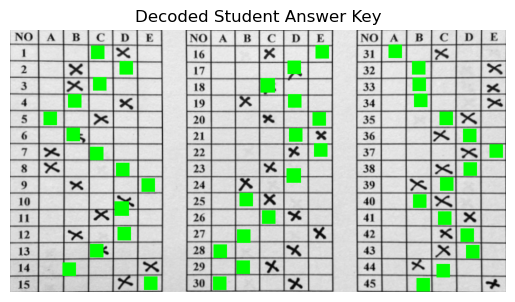

In [ ]:
base64_string = "iVBORw0KGgoAAAANSUhEUgAAA+AAAAINCAIAAAAx6ILCAAAgAElEQVR4AWTB/8/fZXk+/uM4z+v5um9uuKFFLS2QYOp3OxERWRQUfYsD2ilYFWU/LDFuIf5g5t+yZDFZ4pzZWFQYImrQoKVIJtOpwVkKMqjg1klnoQWkve/X8zqP45NcySup+Twe/NKXvrRv37719XUMtiPCdlV54JCZrTUAVSUJQFUtl8vee1UBIBkRJCNCUlVpsC3Jw3KwPU1TZvahBtskMzMiOHiY5/nUqVO//vWvf/GLX0i66qqr3vjGN66vr3PwIMl2ay0iNJCMwfb29vY8zwBIYojBtqSImKaJZFUtl8t5nm1HBMne+/b2tiTbJAGQBOBha2vr+PHjx44d673v3bv38ssv39jYyMzWGgCtkOxDVc3zLKm1lpm2JQGQBMA2AJIYJC2Xy6qyTVKSbQ2993mebQPwwAHAPM9/+MMfTp06VVUXXHDB2tpaREiyTTIGALZjIAlAEoDWWkRo6L0DiAgOHkhmJsneO4AYWmsRUQPJiOAQEZlJsqq2t7eXy6XtaZrW1tYiAgDJiOAKAJK2uQKAZGYCqKp5niV5ABCDJJKttcz0IMk2AA8Rsb6+3lojKWmeZ0kkAdgm2VpbW1sDsFwuJQEg2VoDIAlARLTWMlMDgBxsVxUA2713STGQtF1VtjNzmqbMBKAVDgAkVVVELBaLzJREcufOne9617uuvPLKzc3NiLBNMjNJ1gCAAwbbGOIcGmxzAGBbQ0TYJmlbEoAYJAGQBCAiANje2to6fvz4s88+e/bsWQCttYggKQlADBo8ZCZJABEhqfdeVbEiiWQOJCVVVURM09Ra671vbW1VVWa21iT13quqtba2tuZBku3W2vr6emYul8s+tNYiQhLJzLRdQ2ttmqa1tbVpmlprAGzX0FciIgcOETFN02KxyMx5nm1HBIAaJEVEG2xXVWZO09RaiwjbVQXAtqTM7L3nACAiWmvTNMUgqao8kLRdVZIycxpIYkVSVfXeq2qe5/PPP3+xWNjuvQOIlfUBwNbWliQArbWI6L0vl0uSNUjCQDIiANgmmZmSlstl7912RJDMzIggaZuk7d67bZIA9McAkIyIPsTAlYiQ1IeqiohpmiJinufeO4DMJFlVvXeSmQnANobMBDDPc1WRjAgAtpfLpaQcAFSV7YiQZBtARGRmay0zI8L2PM9VRTIibEtaLpdVRTIiSFaV7YggaZukbQAkAfTeJQHIISIAVJVtALarSlJmkqyqeZ6rimQOHJbLpaSImKYpIqpKUmYuFovLLrvsNa95zTRNEQHAA0lJtjNzmiYAvXdJJAF4JTNJegBAMiKqygOAiCBpmyu2AdRAMiIARATJU6dOHT169Jlnnum9e4gID5JsA4gIDrZJ2q4qSRwiorVWVfM8995tkwRQVfM8VxWAiAAgiWQOJKtquVxO0xQRy+Vye3tbUhti6L1XlSSSAGrovUtqrWWm7d57VUkCYLuqeu8AMnOeZ9uSAGQmVmxnZmttnueqkkSytRYRVTXPc+8dQ2ut9y4pIkjO87y1tdV7z8y1tbWq6r2TjAgAVWWbZETYjojWmu2+UlUeMrO1BqCqJNmWhHP03qsqBwCSYlgbWmu2JZGc5/nMmTPb29u998ViMQ2ZyaG1Nk0TANtVBWB9fb21xnNg4GCbg20OAEi21ra2tmzHCskYSMbggaTtF1988bnnnlsul5dddtmePXvOO++8zCRpu7UWER4kRcRisWitkZymaW0A0Id5nqsqBgyttczkACAzF4tFRJCsFZIRIWm5XM7znJmLxcL2//7v/z722GMnT55897vf/cY3vnHXrl2LxQJAZpIEYLu1Nk1T7902gIggqcE2SduttcVAEgBJAJJ67wCmaWqtAeCAISIyEwDJiNCK7eeee44PPfTQ2972NgBVJSkzSdqWZBtDRLTWMtM2gIgA0AdJAEjajggAEWG7qmwDsA2AZETUMM8zSQAkAWiwnZmtNZI+R+/9pZde+uUvf/ntb3/71Vdf3b9//3ve857Nzc2IyMyIsF1VtklqAJCZEUHSdlX13m2TxEASgIfMjAgAkmogmZkAeu/b29u2I4Kk7RgAzPP88ssvHzly5Ic//KHtG2+88corr7zgggtaa9M0kQTQe5dEsvcuqap67wBywBARkgDYlmSbg21JmdlaI+kVAFXVe68qDLZJ2gZQVSdOnPiP//iPo0eP7tq1693vfvcll1wyTRMHALarSlJmttYASKoqSRGRmVW1XC7neY4IklqpKkmZGRHz0Hsnub6+HhF90IptABFB8uzZs88///yxY8deeumlyy677A1veMOFF16IITMB+I9pIBkROUjqvUsiCUASAJIAbFdVDBwAkLQtqapIRkRmkqyq3ntVLZfLF1544bnnnnvllVde97rXXXHFFRsbGwA8kGytkayq3jsAkrZ77/M8k5ymqbUGoPeuoaoAcKiq3vs8z5Jsc2itRQQAkpkZEVW1XC7neQbQWpvn+fTp03/4wx927dp1yy23fOhDH3rNa14TQ2stIgD03iUBiAjbACICgAcOEWEbgFc42JZkmySAiKgqSbECQBIA2xFBUtL//d//PfTQQ9/73ve2t7fX1tYWiwXJiLANICIys6p67x4yk6TtiLAtCQBJALYxRERrjaSGHKZpIllVvfeIyEzbVSVpmqbWGoDM7L3P82w7IjKz9y4JQA62W2skbVeVJJKZOQ2ZSRKApKqa57n3DiAzI8I2hsxsrU3TBGCe56qKCJI1SALQhqqa57m1RrK1FhE1kLTde4+IqsrMiABAMiJaa5kJQNJyuawq2yQleYgIDgBI2sYgqarmeSY5TVNE2K4q2yQzMyLW19c3NjaqSlJEcADQe7dNUlLvXRKHGEgCyMzWGoDeu+3MxBARmUnSg6Sqsh0RJG1XlSQAEZGD7arqvVcVhswkOU0TSUnL5XKe59ba2toaSQ8AIoJk772qbJMEIMk2gMwEoCEiMtN2VZ05c0ZSay0zIwKAJJK2MZCMgQOAeZ4lzfOMwfY8z5IiorVGUlJVkQRA0rYkACRtV5WGWLGtAYDtqrLNoaokkQRAEsA8zxFhG0AMAKpKw0UXXXTLLbdcc801m5ubsULSg6SIyMwaSEYEBpJe4UoMVWUbf8w2BtsRAaCqAEiKAcDx48e/853vHDp0aJ7nzc3NxWLRWosIDCQxeMiBpAbbJFtr0zRpIBmDbQ0kMxOAhtbaNE2tNQBVBSAzJW1vb8/zDKC11ns/PWTmrl27zj///PX1dZKSPHAAIAkAycyMwTaAiLDde89MDDHYBpCZ0zRxsM0hIjJTUu+dZGsNQET03iWRPH369FNPPXXixInLLrvsrW99644dO+aB5DS01nIAUFUkI4KkbQ1emQaSVdV7ryrbmdlaI2kbA8mIIBkRtkkuFov19fVpmgBIsv0///M/jzzyyO9+97t9+/ZdddVVGxsbi0FSVU0DyaqyTXKaptZaDCQBSLINgAMG2xwAkMzMeZ5tcwUDyViRZBvA1tbW448//tBDD505c+bAgQNvectbNjY2MpNkRLTWIsKDJACZ2VqLiNZaZrbWANjWUFUASEqyHRGtNQ4YMhMASduSAEQEgKrqvUuKiGmaquro0aPf/va3f/Ob33zyk5/80z/90507d07TBCAzAdSwWCymaaqqiMCKbQ22JUXENE2tNQAkMUjqvZOMgSQA2yQjIjNJ9t6rarFYYJBE8plnnuEjjzzyhje8YZ5n2xhsk8TAAQAH2xFBEkBVSQIQAwZJHGyTBGAbAMnMrCoAvXcAkkhmJgbbJDMTK7YBSHr55Zf/8z//85vf/OapU6duu+2266677sILLySZA4CqkgRAku0YSGJFAwcMGgBEBElJJDFEBEkANcTgISJaawB676dOnfrpT3963333ZeYnPvGJa665ZnNzMyIyE4CkqpKUmbZJ2paEQRKA1hpJSTyHJAARQdI2AJJe4WC7qmzHQLKqJNk+efLk4cOHf/SjH+3Zs+ejH/3om9/85vX19cy03XuX5IFkRHAAoAFD772qIoIkAA4RoQGAht47gMy0XVWSSNrWYJtkRGxvbz/zzDOHDx9+5pln3vnOd37oQx+65JJLSGZmaw2AbQ0AbGsAEBGZSbKqeu8kMdgGQBKApKrCEBEkbZO0LamqIoIkBq0sl8tnn332wQcffPrpp6+++uoPfOADr3vd61prtnvvtjOTpKTeOwCStvsAYJqmzARgW5IHDgBsV1UfqgpARLTWSNomOU1TZlZVHzCcOXPmueee+9WvfiXp5ptvvummmy6++GKSmRkRAGxL4mAbAEkAHjCQBEDStiQAJLFimyQAkhFRVbYjgiSAiLBNUlJE2JZ04sSJ+++//+67715fX3/HO96xe/duAFVlG4PtGgDYjgisaCBpuwbbAFpri8WCZA0AYmitZWYNJG1Lysw2SAIg6cyZM8ePHz9x4sRisdi9e/eFF144TRNJABGRmREhybakGiIiM3EO2yRjAEDSNgBJHjKTpKR5nqsqIqZpst17ryqS0zSRnIcXX3zx5MmTtncM0zSRrCqStgHEQBIrvfd5nquKZGZGhKTeO1YigkPvHQAH2733aZpiANB7Xy6XvXeSEUGytXbmzJkXXnjhpZde2tjY2LFjxzRNANbX16dpsr1cLgFwAOCBZA4kJQGICNuSIiIzSdqWBKCqAEREaw2AJNskIyKHqvLQe5dEMiJOnDjxyiuv7Ny5c8eOHZkpKTNbax4iAkAMtiUBiAgAXMlM21UFoLWWmZKqamtrC0AMi8WitUYSgFc4ALANICIkLZfL48ePnzhx4oILLti9e/f5558/TVNrLTMjAoAGACQB9N4lkdRA0nYOEeEVALYBZCYHSQAiAkNE9N5baxwyE4DteZ5///vfP/HEE2tra5/97Gc/+MEPbm5uAoiIzCRpm2TvnWRrrap67wAy0zYHALZJxmCbZETYBkDSts5hOyJ4DknzPJPMzIh49tln77rrrgcffPD1r3/9lVdeuWPHjmmaAEREZpL0IMl2DgBsA7ANICJaa7ZJxgDANgCSEZGZknrvVdVaW19fn6bJtqSIANAHSREh6dSpU48//viRI0de+9rX3nDDDZdccsnGxgYASRhsY7BNMobWWkR4iIjeO4DFYhERtgGQ9NBaIylpmiaSEUEyIjLTdu8dAMmqykwAmWn72LFjDz744NNPP33ttdfeeOONr33ta2333gHk0FqbhojovVcVzmFbQ0Rk5jRNEWEbgAYArTUPmUkSK5JsR8Q0Ta01DSRtHzly5Gtf+9pTTz1166233nLLLeeff35rLSJsA8jMiMhM21UFoLVGEn/MtiTbJDF4wBARmSnJAwYPHFprkqpKEoAzZ878/Oc/v/fee8+ePfvXf/3X+/btWywWMQDIQVINkiJimqbMjAgMtgGQtA2AJICqkkQyM0lGhO3euweSEZGZEUGyqnrvAEgCILlcLn/1q1/dfffdTzzxxOc+97kbbrhhfX09MyOitQagqiSRzExJ0zQBkOQVSR4yMyI4YPAgyTZJ/LEcbEdEVUVE7z0ibJN89tln+fDDD7/5zW/uvXulqlprJAGQxGAbA0kAtiXZ5hARJDXwHLZJYiApyXZVRQRWSAKQZJsrtiOCZO/95ZdfPnLkyH333ffiiy/edttt11133UUXXQQgBgBVJQkASdtcsU0SgG0OACTZBmA7IkhKqiqSmcnBtiQAmUkSgCQAMZCsqtOnT//4xz++5557MvP222+/9tprd+zYEREASEqqKtsccA4NEZGZvfeqiohpmlprJKtKUmaSlFRVAGzjHB4AcACgoapOnjz5yCOPHD58ePfu3bfddtvb3/729fV1n0OSBwARkQOA3rskkgBsx5CZsQLAdu9dEgCSAGxLsg0gM0kCsI2V5XL59NNP33///UePHr322mv379+/Z8+e1to0kKwqSbZJYrCNISJIagAgCUBEAPAKSQCSSEaEzwEgIjhgkFRVtp999tl/+Zd/+fnPf/6Rj3zk1ltv3b17d2YC0ADAgyQArTWStnEODyQzUxIGkgBsV1Xv3TaAzIwIALYBxFBVkgB4OHv27JNPPvmDH/zgxIkTN954480333zxxReT9ACAAwDbADgAsC0pIkhiiIjeu6SIyEwAHkjaxhARtklGhG0MtgFUFUkMJ0+evP/++++7774rrrjiL/7iL6644op5nquKKxqqiiQAkpIigqSkqrINoKokkbTdWpumCUAfMEQEgMzUAMA2gMxsrWWmbUkR8dJLL/1kOO+88z7wgQ/s3bt3sViQlEQyBgC2ASyXy3mebZMEYBsAh4horWWmJAARAUDSPM9VFREkbffebWfmNE22e++SbE/T1Fqrqq2traNHj/7kJz/pvV955ZX79u3b2NggCUASycwkmZkkNQCoKkm2SbbWSAKwTRKApMyMCADzPNuOFUkA2hARkuZ5Xi6XkgCQlPTKK6/86Ec/euyxx17/+tdfc801l1xyyTRN55133jRNkpbLpe3MJClpuVzO8zwNJDXYBmAbAMmIIOkBQ1VFRGaStA3ANskYbAOwPc+zBts//OEPn3zyyX379l111VU7d+4kiUGSbZIRkZkRAUASgFjJzBhsVxWAzCRpuw8RwaG1Nk0TBwy2OUjqvdvOTNt/+MMfHnnkkZ/97GdveMMbrr/++ssvv3xtbS0iSMYgqaoARITt3rttkgBsRwQAkpmJgQMASSRbayQjwjaAiMDQWiMJICIAZCaGra2tJ5544p577nn11Vc///nP33DDDeedd54kkjF46L2TnKbJdlV5ABARJDGQBEBSEgfbMdiuKg29dwCZSTIiAGQmyXmebUcEyWPHjv3DP/zDv/3bvx04cODP//zPX/Oa17TWMMQAQFJVASCJwTYAkpIARERmkvQKAJIYbAOwXVUkW2vTNJG0LYmkJNsRQbKqfve73z3yyCMPPfTQFVdc8Zd/+ZeXXHLJYrHwEBFV1XvnOTBw8JCZvXfbrbWIICkJAEnbGgDkgCEGSb13SQB67xGRA4Ann3zy3nvvfeKJJz7wgQ/cfPPNu3btaq1xAGA7IqaBZB8k2SYZEbZ777YjIjNJAiAZESQBSAJgG0BEAJBE0nZVcYgISfM8256mqap++ctf3nXXXb/+9a/vuOOO/fv3X3jhhZkpyTbJzASQmQCqKgaStjFwkFQDyYgAIMkDhojwgP+fiCBZKyS3t7d/9rOf3XPPPVtbW5///Of37du3WCxiAEAyIiTN86whIlprmUnSgyQAXMlMkpJsk7QNIDNtL5dLDyQzc5qmiJDUe5cUEZlpW9JyuTx69Ojdd9995MiRz33uc3/2Z3/WWiOZA0mvYOAgyTZWbAPITA4esOIhMwHYBsBzSMpMSQB675kpyfZvf/tbPvTQQ/v27dPQeycpqbVGEoBtALYBkLQdEQBsS8JAEgBJSb13khEBgCQAkhGBwXZVAYjBf4wkBg+ZCaD3/sorrxw9evTee+89efLkJz7xieuuu27Hjh0AuCIJKx4ARAQH2wAyk2RVaYgBg6SqIpmZJD1IApCZJG1LAhARJG1X1enTpx999NF//dd/BfCZz3zmPe95z86dOzOTAwDbAGwD8ADAA4DWWkQsl0tJJDMzIgDYBkDSdgweSEYEgHmee++Z2VrzOQDM8/z8888fPnz44YcfvvTSS2+99da3v/3ti8Wi9w6gtRYRkmxjsE0yBts4R0QA8ACAAwANXAHgAQAHrHjY2to6duzYd7/73SNHjlxzzTU333zzpZde2lqbBgBVpSEiOHiFZAy2NdgmGRG2JQHITJK2OQDwCgCSMQCICABVBeC555676667Hn300VtuueXjH//4nj17WmskbVeVJAAaAOQQESQjwrYkDyQjwrYk2wBI2u69S+IAICJI2gZAEkANGGwvl8vHH3/8e9/73vHjxz/84Q/fdNNNr3vd6wDYxsBBA0kAMZDEQNIDSdsAIoKkBwweAJC0nZkkbQOwXVW253kGkMPvf//7b33rW/fdd9/b3va2L37xi5dffvnW1pakiGitZaYHSRGBwXZEkLRdVSRjAEDSNoDMtN17l4SBpCQMHDyQjIjMJCkpM0+dOnXo0KEf/OAHm5ubBw8e3LdvX2stIqrKNskcMMyDpMwEYJsrkjgAIBkRACT1gaRtACQzkyQASRyqCsA0TSR7748++uj999+/vb194403XnfddZubmwAys6oigmREkARQVZIyk2RESKoqACQjgmQMkmyTtF1VkkjmAEBSrACQBMA2B0nb29tf/epXH3jggXe9610HDx5885vfPE1Ta22aJkm9d9sRQVLS9vb2crlcW1ubpgmAba3EwAGAJAAkAfTeAWQmSa2QbK1N0wRAUu+9BpLb29tf/vKX//3f//2GG2646aabdu/ejRVJGCKCKwAk2c5MkhEBgCQA2wA4AOi92yYJQBJXIiIzAdjGUFW996rKTNsvv/zy/fff/8ADD1x99dUHDx7cu3dvaw0DB0lVZTsiAEgCQDIiAJAEYLuqbAMgGREkJQGYpkkSz2EbAIeqykwAEUESwKuvvvrYY499+ctfPnHixBe/+MXrr79+Y2PDNsnMJCmpqjBkJgbbGqZpwuBBEoCIIKmBZEQAsI1BA8mIyMyqApCZJD1IOnbs2Je//OUf//jHd9xxx8GDB3fu3NlaA0AyIkjallRVtjl4wCAJQGa21mxLsg0gIgDY1hARJD1ERGYC0NBaAxARAEhK+t3vfvfggw9+//vff+Mb33jnnXdefPHFmUkyIkhWVe8dAMnMjAjbkqqKK601232IgSsA5nm23VoDkJkAbGOoqt47AJIeuPLUU0/dc889R48eff/733/TTTft2bNnmqbWWkQA4JCZETHPswYMMdiuKtsRQdJ2VZHMgaRXAESE7aoCQNJ2RFTVPM+SIiIzW2uSfvnLX/7TP/3T008/ffvtt998882bm5uZSdI2AA4RIQnANE0AbPMctnvvGgBkZkTYriqvcJBkmyu2MdiuKpKSSG5tbf30pz/9xje+sbW1deedd77zne9cW1uLiBxIApDUe5cEICJIArCNQZJtkhEBICJaayQB2JZkm6Tt3rttkrFiu/deVSTb0HuXtFwujxw5cs899xw9evSzn/3sgQMHWmu2MzMiSAIgKcl2RFQVSUm2OQCwTTIGABoAkMQQEa21iJBkOyIA2JYEoIbMJJmZvXdJx44d46FDh/bt2+dBUkRkpqTeOwaSkgDEigdJWJGEofceESQBZCZJSbYBeJDUWsvMiNBgm2RmRoSkqpIEgKSk3vuZM2eOHDly7733vvDCCwcPHrz++ut37NhBEkAMACLCAwDbkkhGBEnbJDMzIqpKkgeSALwCgAMAkrZxDtsAOEjqvb/44os/+clPvvnNb9q+4447rr322gsvvDAzuWKbpG0AtjFUlW2StnkOSbY5APAQEZkJoKoARARJSb13Dh4igmRVbW1tPf/88w899NDDDz98+eWXHzx4cN++fWtra5Jsk4yI1lpm+hwAMjMiSNquKgCZKWm5XEoiGREAbAOIwTZJAJJsAyAZEbYB2JZke3t7++mnn37ggQeOHDny7ne/e//+/VdcccVischMkrYl2ZZEEoMHSSQzMyJsA/AKSQCSALTWMHAFgG0NtknGCknbvfdjx4597Wtfe/TRR2+66aZPfOITe/bsyUyStqsKg+2qsk0yBg6ZSRIrtjXYxmBbEle8whUPkmzHsFwun3jiie9+97vPPPPMBz/4wf379+/atYtkrHjovUsiaTsiMhOAbQweSOYAQFJVSbJNMiKwYjsiAEgiKQlDVXGQdPr06e985zvf+MY39u7d+8UvfnHv3r2SAEQESUlVZZtkRNgmaZukpKqSlJnTNGUmAA+SSNqWhEESANsAMjMiSAKoKkkkI4Kk7cw8ffr04cOHDx06dNFFF33yk5/8kz/5Ew62JZHMzIggCaCqeu8AIoIrEQGgqjBEBEkPWgFAEkNEYCCZmSSrSlJrzXZEPPzww1//+teXy+X+/fs/+MEPbm5uksxMSZlZVQAyk2RV2SYJICJsz/NcVSQB2I6I1lpEzPNsWxIG2xGRma21zPQgqfdeVQBy6L0DyMy///u/v//++6+66qrbb7/9bW972zRNEZGZtqsKAEkAtiXZJgnANkkAtquKZGuNJADbkkhGBABJJAHY1mA7IqZpWiwWAOZ5ripJABaLRe/9b//2b3/0ox/dfPPN+/fv3717t22SWLFN0jaA1lpESKqqzCQJwHYMGEjaJllVmUmyBtuSIqK1FhEYbEuqqt677YgA8Morr9w3vOc977n99tvf9KY3TdOEwYMGABFBEoAk25mJITMl1eAhIjKTJICIkGSbJFZISgJAMiKwYvvVV1/9xS9+8ZWvfOXUqVNf+MIX3vve925sbACIiMwEUFWSMtM2AJIRAUBSVWVmRNiuKkkAMrO1BmCe56qyzQFADCQ9ALA9z7PtaZoiQgPJZ5999qtf/erDDz/86U9/+tZbb33ta18bQ2stImxXlSQOAGwDsA3AtiSSmUlSkm0AJCMCgCSSmQlAEgCSEWG79y4pIqZpAkBSQ1U9//zz3x/e8pa33HnnnTt37pymKSJIApBUVbZJZmZrjWRVSbINIDOnaZK0XC63trbakJkkAUiqKpKtNZIASGLQYJukbQCSMNh+8skn77333scff/z973//gQMH9uzZM01TZvKPSZrn2XYMHABIsk3SK5JIttYigmRVkYwI2xyqShIAkgCWQ2a2gSSAI0eO/OM//uN//dd/fepTn/rwhz+8ubnZWosVkgAkZWZEACCJwYOkGjCQbK1FhG1JAGIgabv3XlUkM5OkBtskJUUEhjNnzjz66KPf+MY3tra27rzzzne9613r6+sAImKxWESEbQ0kAZD0OQBUFYCIIGkbQERkJgbbknA3SOoAACAASURBVEjalhQRACKCpO0abEdEay0ze++Szp49+4tf/OLrX//6sWPH/uqv/urAgQPTNEmKiMwkaZskANskbZO0XVUYJNlurU3TBEArHDxExDRNEQHANoaqsk2yqgBkZkQAmOeZ5FNPPcUf/OAHb3/723vvtjOT5DRNvfft7e2zQ++9tbZYaa2RlFRVvfd5nvsgKTMXi8XGxsY0TRxsnx22BtsANjY2LrjggrW1tWmaMJCMCJK2JdkGIMm2pJdffvmxxx771re+9corrxw8ePD666/fuXMnBpIRASAiJNmOCA22OdgmCSAibEuqKtskIwKAJK7YjojMJGlbElZsYyDZez958uSjjz563333ZeYdd9zx3ve+d3Nz0zYAkgAk2eYQESRt994l2Z7n2fba2to0TbZJ2q4qkhEhqaoAkMQQEZnZWosI25JqsE0SwzzPx48fP3To0MMPP3zppZcePHjwyiuvPO+88zBoiAFAay0zJWEgKQkASQ22JQEgKck2gIjAQBIAB9sRkZkkbUuqwfbZs2effvrpBx544OjRo9dcc83HPvaxvXv3TtPEwSuSANjWOUjaxkBymiaSVQWApG0OHgBwiAgPkmxLIpmZESEJgO3f/OY399xzzyOPPPKhD33oM5/5zOWXX87BNgCvAJBE0iskMzMiSGYmgKqyDcC2JNsAONgGQBKAJJIAbJPEiu3WWlUdOXLkW9/61lNPPfX+97//wIEDu3btysxpmjKTpIc+SGqtRQQA2wBIRoRXIiIzAWjFNklJAEgCIBkRGiICQESQrCrbJCW98MIL3/nOd+6+++43velNf/M3f7N3717bbQCwXC577wBisB0RGgDYlgQgIjITg1cAkAQgqaoAZCaAzCQZEQBsSwKQmVVle5qml19++fDhw4cOHdrY2PjkJz959dVX994BRISkiADAAUBVScLAlYjQkAMADxqqynZmRoRtABFBEoBtAB4yc5qmqsrMQ4cO/fM///NyuTxw4MD/+3//76KLLgJgW1JEZCYHAJIAZGZEZCaA5XIpCYBtSbY5RIRtSRhsAyCZQ0QAqCpJAEjalkQyIra2tr70pS9997vfvfrqqz/96U+/4x3vWF9fz0xJVSXJNoCIyEySGCTVwBUAXNEQEZkJwDYADxFBEkNE2K7Btoa1tbV5nv/u7/7u8OHDBw4c+OhHP7p7927bACQBiAhJmWkbQEQA6L1LmqYJAIfMJOmBJAANrbWIsA1AUlUBaK3VwAGABpKttd77yZMn77333vvuu+9973vf7bff/pa3vGVtbQ2AB0keSGJFku3MxJCZVaXBNoCIyEySVSUJKyQBZGZrDQCHquq9e4iIra2tn//851/5yldeeOGFL3zhC+973/s2NzdtS4oIkrZ77xEhiWRmAvAKyYiwPc8zyTaQlDTPc1XZJmmbQ5yj9z7Pc1W1oaok2Y6I//7v/77rrrsOHTr08Y9//Lbbbrv00ksXiwVJ2zXYJhmDB0kAOEgCwME2AJIYSGZmRJDsvUuyjYGkpKoCkJkkW2sAJPXef/vb337/+9//4Q9/+Na3vvXOO++8+OKLW2sk8cdIZmZE2MYgyXYOkpbLZVW11jIzImz3ITMjwnZm2uagwTbJiJBkWxKHeZ6PHj36zW9+84knnrj++us/9rGP7d69e5qmzCQJgCQA25JsSyIZAwAOkjKz9w5Akm0AmYmBpO0YSFZV7x1ARGioKpLTNGUmANsAHn/88a985StPPfXUpz71qY985CMXXXTRNE0RQdI2SQCS8v8jC86frCzT+wF/PvfzvOd0N3SzN7I1zQ7SDSIiiCKbOuyiLJLM5KdJMlOpcoyZpJJ/Ij9MJZnMt5wlOjOilgiKqCg7sjNCNwjIJnsD3U3v3eec933u+1v1VHWVqVyXc957VTUzAGaWRWamquwnIgCyyDmXi5xzZpZlWZqmZkbSOUdSVUMIqkoSQC6XExEz6+7uPnr06Pvvv9/X1/f3f//3c+bMqaiocJGImFkIAZFzDoCqmlmIVNUiRiKiqmYGgKT3XkTYD4CZiQhJjcwMgEUAnHMikmUZgEKhcObMmXfffff27ds//elPV65cmc/nQwiMAJgZAInMjJGqlkqlLMtU1SLnXJIkWZaVSqUQAgARscg5V1ZWliSJi+wHGAFwzpE0M1VN05Tk5cuX+cUXX9TV1QFQVTMTEZJmFkK4f//+9evXHz16RNJ7n8/nBw8eXFNTM3jwYBEplUodHR1NTU3379/v6uoSkcrKyurq6smTJw8YMMA5F0Lo6upqamq6detWc3Nzmqa5XC6E4L0fPnz4mDFjRo0aNWjQIO89IhExM5IAzCxEZtbZ2dnY2Lht27bOzs7NmzcvWrRo6NChImL9ADjnSJqZiADQyMxIaj8RIZmmaVdXl5kNGDCgrKyMJCJVJQmApHNORMwM/bQfABFR1ebm5iNHjmzbti2fz2/atGn+/PlDhw4VEQAkAWhE0swkAhBCKBQKPT09aZqSrKioKCsrKxaLaZpa5Jzz3ouIcy5JEpIWkXSRiJgZADMLIdgPlEqlu3fv7tu379ChQ+PGjduwYUN9fX15ebmZAbB+LiIJIIRAUkRUNYTAfqpaLBZLpVKWZSS998457z2ALMtExHvvnEM/EXHOkQRgZqoaQjCzYrF49erVL7744uzZs0888cT69esnTpzonCMpEQCNLEKkqqVSKcsyMyPpnAPgnBMRM1NVkgBEhKSZSQTAIvYzsxACSe89STMjqao3btzYuXPn3r17582b9+Mf/3jSpEkkzQyAqpIUETMjGULQyCIAZkZSRHK5nHMuTdMsy0gCUFVEIgLAzEIILgJgEUkAZgaApERZlp07d2779u2XLl169tln16xZU1NTkySJmTGyfiGELMsAkEREUiKSqmpmJK0fADMDQFJESIYQVNU5JyJmpqohBIkAWOScCyE0Nzd/+umn27Ztq62t/eUvfzlhwgQzc84lSeK9N7Msy1RVRBCJiKqGEBipqpmRTJIEAMkQmZmIAAghALDIOcd+zjkRUVX0U9UQgve+s7Pz4MGDe/fuHTBgwKuvvjpnzhxVlcj6AXDOiYiZhRBUVURIAjAzVTUzks45AGamqgBEhKSqknTOiYiqmhkAM1NVM0MkIs45ACEEAPv373/vvfcKhcKqVauWLVs2aNAgACS99yJCUkQAqCoiF6lqmqYARASARiRV1TkHgCQiRohUNYRAMoRA0ntPEoCqZlnmvU+SpK2t7Te/+c0nn3wyf/78H//4x3V1dc45Vc2yzMwkQiQizjmSAEREVUMIIgLA+okIoizLSCZJAsAiRt575xyALMtU1cxU1SJVNTOSpVLpv//7v/ft2/ejH/3o5ZdfHjNmDAARISkizjkzE5EQQpZlAFQ1hGBmIuKcI+m9J2lmqgrAzEiamYgwMjMRUVUzA0BSVQGICABVNTMRIWlmxWKxtbV1x44dH3300TPPPPPaa69NmTIll8sBMDNVJemcMzNVBcBIVc2MpKqSBGBmJAGYmUSqKiIk0zS1yDknIgDMjKSIeO/NLI1UVURIdnd3nz179re//W1bW9svfvGLZ599trKykqSqAnDOqaqZiUiWZarqvRcRAGYGQFWdc6oaQvDei4iqAiCpqmamqgDYzyIRcc5lWRZCSJJERLLIzEg655qamt59993PP/98w4YN69evHzt2bJIkqmpmIQRVRT+SImJmJCVS1RCCRYhcZGaqKiIAVJVkmqYASAJQVRepKskQQpIk3ntVDSGkaXrjxo0vvvhi//799fX1P//5zwcPHgxARJxzAMyMpKoC8N6LCABGZhZCkAhACIEkIjMLIagqSe89yRACAFUVEZJmBoAkADNTVTMDwKhYLF64cGH79u2XLl1asmTJmjVrqqurnXMkXYQfMLMQgog450TEzLJ+3vsQgpmpaghBRJIkcc6FEEh671WVkaqGEETEOWdmqgqAZJIkGpH03l+8ePEPf/jD+fPnN2/evGzZssGDB3vvJUqSxDlnkXNOVbMsIykiAEIIqkpSVUUkhFAsFru7u0ulUpqmAMqiXC4nIqpKEoCIOOdEBICqmpmImJn3HoCZAejr6zt+/PjWrVv7+vp++tOfzp07t6KiwjlHUkRUNYQgIiQBmJmqOuf6+vq6u7t7enpUlaRzjmQIoVgsAiBZVlZWUVGRz+eTiJGqOucQqSoiMwMgIow0CiE0NDS88847V69e/Yd/+Ic1a9aICAAzA2ARAIlUVURUNcuyrq6ujo6O3t7eQqFQLBZJqmqhUOjr60vTNMsyjXK53GOPPTZjxowBAwaUlZWJSJZlZsYIACMRAWBmALIsE5HvvvuOn332WV1dnXOOpJkBcM6ZWZZlzc3NDQ0NR44cOXfuXGtra3l5+ZQpU5YtW7Zw4cKqqiqS3d3dV69e/frrr8+ePVteXj537tz6+vrZs2fn83mSDx48aGhoOHPmzN27d5MkGT169LBhw3p6epqbm9vb2ysrK+vq6ubPn19TU+MikmZG0sxExMyyLEvTtLOzs6GhYdu2bT09PRs3bly8ePHw4cNFRCMzIwnAzESEpIiYGQCSZpZlWQjBzJxzqvro0aOGhoZSqTRz5syampoQgnOOpJmRBGBmAEQEAEkA+gNmJiJm1tbWdvTo0Q8//DCfz2/cuPHpp58eMmSIiKCfmYkISTMjicjMWlpazpw5c/XqVeccyXw+nyQJgEIUQkiSZPTo0dOnT6+pqcnn84jYD5FFJK2fqpZKpXv37u3fv//QoUPjxo3buHHjzJkzy8rKRISk/W8igh8wsyzLVNXMisViZ9Td3d3V1RVCqKioqKqqKi8vT5KEZD6fr6ysLCsrc87hfxMRACRV1cz6+vquXLmye/fuhoaG2bNnr127tra21nsv/RiJCABVtahUKnV0dHR2dqZpKiLOOZIALBKRfD6fy+Xy+Xwul3POiQgAjUiKiHNORACEEMzMOSciZkYyy7KrV69++OGHR44cefbZZ7ds2TJx4kQAFgEQEe89gBCRRJRlWalUyrIMgHNOREiaWZZlqopIIh+JCABGAMwMAEkAZgaApJkBKJVKjY2N27dv/+677xYtWrRmzZqxY8fmcjlGFgEgGUJQVTMjKREjM9PIzCQiCYAkADNTVTMTEZJmFkJQVZJmRtI5h0hEVBWAqra3t3/22WfvvfdeTU3Nm2++OXHiROccIusHwMyyLHPOee/NzHsvIhpZJBEiMxMRMwshmBnJNE3NLIQgIkmS5PN5khqRdM4BSNMUgHPu0aNH+6OqqqoNGzbMmjVLRFwEQFXxAyKCiCQiVQ0hqKqZkRSREIL0MzMAJAGoKvqpagjBzEi6CEAIIcsyAPv373///ffTNF2zZs3y5curqqoAiIhzDgBJHwEIkapmWWaRcw6AmTEKEUkRUVUXJUnivTczVQWQpin6qSpJixCR7OzsfOuttz7//PN58+Zt2bJlxowZIpKmKQARyeVy3nuSZqaqAJxzJEMIEhWLRVUFIJGqZllmZkmSkARgZiEEAD5yzplZlmWqStLMGAEIIZiZiBQKhV/96lcHDx5csWLFunXrRo8eTdI5571PkgQAyRCRFJEQAdDIe0/SIpIiYpGImJmIkFRVks45ACEEM0MkIiQRMTKzUqnU3Ny8bdu2HTt2LFy4cNOmTZMnT/beA5DIOUcyRKoqIiRDCKoqIhapqvdeRMyMpJkBSJIkhFAqlUSEJACSIgJAIjNTVRFhFCJV7enpOXXq1FtvvdXd3f2LX/xi4cKFAwYMAGBmAJxzFpFUVTNzzpFUVTNT1RCC955RkiQAQghmRtIiAGaWZZmqmpmIJEkCIMsyVfXeO+fMTFUBOOe892Z27dq1P/7xj/v379+yZcv69esfe+wx7z2AUqlULBazLCNpZrlcTlWdc0mSeO8BZFlWKpUKhUKWZapKMpfL5fN55xxJMwOgqsVisaurK8syF4lIkiS5XM57n8vlADBSVZIACoXC9evXd+/effDgwbq6up/97GfDhg0TEQAiQhIASTMj6b0nCYD9QuScMzPnnKoWCoVisWhm3nvnnPc+l8upagjBe29mADRiPzNTVUQWpWl68eLFHTt2fPfdd4sXL169evWIESO899IPAEmLAKgqAOdclmXt7e0dHR2qKiJZlgEwsyzLAIhIEnnvy8vLBwwYAEBEsixzzokISVU1M++9cw5RCMHMRMQ59+233/7hD3+4cuXKxo0bV61aVVVVZWYkXSQiGomIqmZZBoARADPLsixN066urvv371+/fr2lpSXLsvLy8srKygEDBlRUVOTz+UKhQLK2tnbo0KHl5eUiYmaqamYAzAyAcw6AmQHo7e09duzYe++9VywWf/7zn8+ZM6esrAwRI4lUNYSgqiKiqoVCobW19ebNm3fu3Onu7u7r6wNQVVVVVlamqqVSKYRQVlY2cuTIcePGjRw5Mp/PiwhJ55yZiQhJ60fSe88oyzIzCyE0NDS8/fbbV69eff3111966SXnHACSACwiKSIAsiwTEYvSNO3t7X3w4EFjY+M333zT3NzsvR85cmRtbW1VVVWhUHj48OG9e/f6+vomT568Zs2ampqafD6fJImZASAJwMwQMTIzkgBInj9/njt37pw1a1Y+n3fOASAJIEmSEEJfX197e/vJkyc/+eSTEydO9PX1VVVV1dfXb9y4ce7cuYMGDQoh9Pb2Xrhw4ejRo2marlixYurUqRUVFSGE5ubmw4cP79u3r6mpafLkyc8///wTTzwxePDg7u7uGzduHD58+PTp00mSPPvss0uXLh0/fvyAAQNIhhBExMyccyRDCKVSqb29vbGx8YMPPuju7t64ceOSJUtGjBghIgBUFQBJM1NV/h+qGkJQVTMTkUKh8N1333355ZdtbW3Lli1bvHixiJB0zpkZfsA5B8DMANgPIMqyrK2t7ciRI9u3by8rK9u4ceO8efOGDBkiIqpqZgBEhKSZqSoAEQFAslQqPXz48NatWydOnPjqq69KpVJlZeXkyZNra2uzLLsZpWk6ZcqUF1544emnnx40aJBzzntPMoSgqowAiAgAMwOgqmma3rt3b//+/QcOHBg7duyGDRsef/zxsrIyACICgKSZqSoAiQBYpKohhL6+vra2tuvXr3/77bcPHz40s4qKigEDBuRyOTNL05RkkiRjxoypq6sbOXJkkiTOOZJmpqoA2M+iQqFw5cqVr776qrGxsb6+fvXq1bW1tblczkVmBkAiABoByLKspaXl+++/v379+v3790ulUi6XK49IlkolERk2bNi4cePGjh1bVVWVz+dJakRSRACICCMzAyAiqmpmWZZdunTpvffe++abbxYvXrx58+aamhqSAPi/qaqZkTQzVS2VSk1NTTdu3Ojt7fXel5eXk0zTtFAo9PX1qSoAVXXOjRo1asaMGUOGDPHei4j2MzNG6CciAPr6+s6ePfvRRx9duXJl8eLFa9euHTt2bJIkIkLSzDQiGUJQVZIiwn4ArB9JESFpZgAYAciyLITgnJOoVCqFEBh575MkAUASQAhBVUMIra2tu3btev/992tra//t3/5t/Pjx3vsQQrFY7Ojo6O7uzrIMgERDhw4dMGCAc857b2ZdXV2tra2FQgGAqorI8OHDhwwZkiSJmWVZViwWOzs7W1tbOzs7S6VSlmVJkgwePHjkyJFVVVVlZWXee41EBABJEWlubt6zZ8+BAwcGDRq0YcOGJ554QkR8BEBVEZmZqgJwzomIqpoZADPTiKSZdXd3A6isrHTO4QeyLFNVks45khoBIOmcExFVDSGoKsl9+/a9//77aZquXr36hRdeGDRokEXOOQDOOe89ADMDYGZpmmZZBiDLMkYAVBWRmamqc85775wDIBEjAN77NE3NLISgquwnIgCyLOvp6fntb3+7a9euOXPmbNmypb6+vqysjKSqImIEwPoB8N6TDCE457IsCyFkWVYqlfr6+tI0FZFcLucjklmWiUgul3PO+UhVzSyEUCqVAHjvnXMi4pwj2dnZ+e///u+HDh1atWrVunXrxo4dKyLsp6oASEoUQsiyjKSqFgqFNE3NDICIqGoIAQBJ730+n08iRmZGUkQAhBAAWMR+AEiaWZZl9+7de//99z/99NPnnntu8+bNU6dOTZIEACMRcc6pagjBzNBPVYvFYk9Pj4gAcM6RzPqZmYgAcM7l8/mysjLvfZIkzjmNSJqZqgIgmSSJmYUQzKyrq+vkyZNvvfVWT0/PG2+8sWDBggEDBpC0SEQYmVkIwcwYWT+SzjkAJC1SVQAkJQJQKpWyLFPVJEl8BCBNU1VllCSJ9z7LshCCc05VL1269Mc//vHw4cNbtmxZt27dqFGj8vm8iPT19bW2tra0tHR1dZkZgPLy8iFRWVmZ975UKrW2tjY1NbW2thYKhQEDBowaNWrkyJEDBgzw3ocQuru7Hz58eO/evQcPHgDw3osIgIqKipHRkCFDkiTJ5XJmFkIQEZLFYvHmzZu7d+8+ePDgzJkzf/aznw0bNsx7D4CkiJiZqgJwzklkZgBIAjAzjQA451T1+vXrd+7cGTFixJgxY/L5fC6X895nWea9T5Ik9FNVRmYWQgAgImamqmaWpunFixc/+eST7777bvHixatXrx41apRzDpGZiQgjM1NVESHpnOvt7b1z586VK1euXr1648aNrq6uNE1JlpeXi0gIwTlXWVlZU1NTX18/derUsrKyXC4nIiEEESGpqgAsUlXvPUkAIuKcu3Dhwttvv3316tX169evWrVq4MCBALz3zjmSADQSEY1IioiqkjSzzs7Oy5cvHz9+/MyZM93d3aNGjZoxY0ZNTQ2ABw8e3L1799GjR729vWPHjn3llVcmTJhQUVFhZlmWqSoikhKZmaqaWW9v75EjR7Zu3Zqm6RtvvDF79uzy8nKSiFxEMssyEQkhmFkWFQqFW7duHT9+/MSJE7dv3y6VSrNmzZo7d+7gwYM7OjquX7/e1NSUJMnkyZPnzp07ffr0iooKM0uShKRzDoCZqaqZiYhzDlEIAUCWZd98883bb7998+bN119//YUXXnDOAWCESCIzK5VKIuKcMzNVzbKsqanp4MGDu3fvvnHjRnl5+TPPPLNs2bLx48c759ra2i5fvvzdd9/lcrk1a9bMmDEjSRLnHEkzA2ARADMDQNLMADjnADQ2NnLnzp2zZs0qKytzzkmkqhaVSqWenp5z587t2rXr8OHDjx49MrPBgwc/++yzq1evfvzxx6uqqszs7t27f/nLX1pbW1euXDlmzBgAHR0dx48f//jjjy9cuFBdXb1mzZq1a9eOHDlSRIrFYnt7+9mzZ3fs2HH+/Pnhw4cvWbJk+fLlU6dOBWBm6CciZlYqldrb28+dO/fBBx90dHRs2LBh8eLFI0aMEBFGZgZARACYGSNEFgEwsxCCmbW3t3/99dc7d+5sb29/8cUX169fP3z4cACMVNXMJGJkPwCAJAAzCyG0tbUdPXr0o48+SpJk06ZN8+bNGzRokIggEhGSZpZlWQgBgHOOEYBSqfTo0aO9e/e+9dZb7e3tw4YNW7Zs2Ysvvjhs2LBbt24djtI0XbBgwerVq2fPnl1ZWemcM7MsywCIiPfezNCPpKoWi8X79+/v379/375948aN27BhQ11dXT6fNzP2A0ASgJkhIqmqIYS+vr6HDx+eP3/+yJEjt2/frq6ufvLJJ+vq6qqrqwG0t7dfvnz55MmTd+7cqaurW7Vq1dSpU/P5PEkRARBCMDNGZkYSQF9f35UrV7766qvz58/X19evWbOmtrY2SRJGZgbAOUfSzEgCIKmqnZ2dly9fPnDgwNGjRx8+fJjP56dPn15fXz9kyJCOjo579+51dnYOGTJk+vTp9fX1Y8eOzeVyZgaAEQDpB0BVAZiZqoYQrl69+sEHH5w6dWrhwoWbNm2qra1lJJGZkQRgEUkzIxlCePTo0e3bt69evXr27NmWlhaSI0aMqKmpGTJkCICWlpZr1661tbXNmDFj7dq148ePz+VyImKRqgIQEeeciJAEQFJVe3t7z5w589FHH125cmXp0qXr1q0bM2aMc05EzAyAqpoZADMDICIkzYwRADNDJCJmJiLWT0RIZlmmqs45kiKikZmRdM6JCCIz034tLS07d+784IMPJk2a9C//8i/jx4/33pPs6em5fv365cuXm5qa+vr6RMR7P3369Llz5w4ePDhJkjRN79y5c/ny5Zs3bzY3Nw8YMGDixIn19fWPPfZYkiQhhPb29uvXr1+5cqW1tTVJksrKyhBCV1dXlmWPPfbYtGnTJkyYMGTIEO99CEFEnHOqCqClpeWrr77at2/foEGDNm7cOHfuXOecRADMDJGZqSoA55yIqKqZASBpEYCenp6GhgYRmTFjxsCBAyUCoKppmpqZc857TxKRRAC0H6K9e/f++c9/7u3tXbVq1YoVK0aMGCEiZuacExGLVBUASVVF1NzcfPv27fv37xeLReeciABwzqlqb2+v937IkCGPPfZYdXV1VVVVPp83sxACSedclmUWARARkgBIOudKpVKhUPjd7373ySef1NfXb9q0adasWWVlZSLiIpKIzExVzQyR9z6EwKhYLHZ0dDx48OD+/fstLS3FYtE5V15eXlZWlo9KpdLgwYPHjx8/aNAgESGpqgBUlST6iYj3HkB3d/evfvWr/fv3r1ix4uWXX66pqXHOmVkIgWQIQVWTJPHem1kIwcxUtbu7+/79+3fv3m1ubjYzEfHeO+dIAnDODRw4cFRUUVHhvScpIs457WdmABiJCEkzU9Usy+7evbt169bPP//82Wef3bJly9SpU/P5vIhYRNJ7D0BVzUwjAGmaPnz48Pr16/fu3Wtra/PeiwhJM8uyLE3TUqlEsqKiora2dv78+YMGDUqSREQQmVkIIcsy55yZiQgAMwPQ1dV1pEtDQAAAIABJREFU6tSp3/72t11dXW+++eb8+fMrKipIImJkZqpqZohIIjIzkgCcc6qaZZmqknTOMXLOmVmapmbmvRcRACJCMssyACQBkASgkYiEEC5fvvzHP/7x66+/3rx589q1a0ePHp3L5bz3bW1t165dO3fu3IULFx4+fKiq48aNW7hw4YwZM4YNG5bL5YrF4o0bN7799tuzZ892dHRMmzZt3rx5kyZNqqysFJGurq5r166dPn362rVr+Xx+3LhxAwcOTNO0paWls7OzsrJy8uTJ06dPHz16dFVVlXMO/VT11q1bX3zxxf79+2fNmvV3f/d3gwYN8t4750SEpJmpKgCJAJgZ+plZCMEiEent7d2/f/+5c+eefPLJuXPnVlRU5HI5EVHVXC7nvQ+RmSEyM1UNIZB0zgFQVTMrlUoXL1785JNPLl++vGTJktWrV48cOTKXy5mZRiLinCNp/QA450IIPT09TU1N586dO3jw4Lffftvb2ztp0qRly5YNHTr0/v37Fy9evHPnjvd+4sSJy5Yte/LJJ8vKypIkIamqAETEzBCZmffezETEOUfy22+/feeddy5fvvzqq6++9NJLVVVVSZJIPwAhBFUlaREAETGzEEJXV9f58+cPHTp0+vTpLMuefPLJZ555ZsqUKVVVVQC6u7u///77U6dOnTt3buzYsX/zN38zYcKEXC6nqiEEVQVA0kUkrV93d/eRI0e2bt0aQnjjjTfq6+srKipERFUBMBIRACISQiBpZmmaqmpLS8uxY8d279594cKF3t7eJUuWvPzyyxMmTOjr67t48eKJEycuXbrkva+vr1+yZMnUqVPz+byLkiQREYsAkBQRAKpqZgBKpdLp06f/53/+5/79+6+//vry5cudc4hEhCQAks45VU3T1DnnvTezEDU3Nx86dOjTTz+9cuUKyXXR+PHjSZZKpZaWlosXL7a3ty9YsGDatGkknXMkzUxVLQKgqiQBkATA6Pz58/zkk09mz56dz+dJiohzzsyyLEvTFEB3d/f58+ePHTt2+fLltra227dvd3d3V1dXL168ePny5dOnTy8vL29paTlz5kxzc/Pq1asfe+yxvr6+69evb9u2bf/+/b29vU899dTmzZuXLFninDOzLMtKpVJTU9OuXbs+++yzR48e1dfXr1y58qWXXho4cGAIgSQAMxMRMysWi52dnQ0NDR999FFbW9uGDRuef/754cOHO+dEBICqAnDOkURE0swAqCr6qWqxWLx9+/b27du//PLLQqGwcOHCTZs2zZkzh6SZiYhFzjkRASAiJM1MI0YAVDWE0NbWdvTo0W3btjnnNm3a9PTTTw8aNEhESEoEIIsAiAgAkhKFELq6uvbt2/df//VfDx48GD58+KpVqzZt2jRu3Lj79+8fPHjwgw8+uHr16sSJE1euXLlixYoxY8Z4783MOUdSVSWyCICZqWqxWGxqatofjR8/fuPGjXV1dfl8XlXNjKSIkDQzAKqKiKSqFovF1tbWb775Zu/evdeuXautrV26dOns2bNHjRpVXl4OoFgstra2njx5cu/evdXV1evWrZs+fXo+n5eIpKoCIGlmqsqor6/vypUrX331VUNDw6xZs9atWzdhwgTnHCIzI+mcA6CqJEUEUZqmt27d2rNnz65du65cuVJRUbFkyZKVK1fW1tb29vZeuHDhyJEjd+7cGTp06MKFCxctWjR69GjvPQCSAEg650SEJCJVtUhVb9y4sW3btq+//vqpp5567bXXJkyY4JyTiCQAMwNAEoCZMQJQKBRaWlrOnj27Y8eOCxcukJw9e/YLL7wwZcqUXC738OHDM2fOnDt3rrq6ev369dOmTcvn80mSkLQIAEkRIQnAIlUtFArnzp3bvn375cuXlyxZsnbt2lGjRjnnAJDED5iZiJC0SCIAZqaqZiYiqiqRqpqZiJBUVTNzzlkkIgBU1cyccyICQCMzQ9TS0vLxxx9v3bp18uTJ//zP/1xbW5vP50mmadre3n7t2rVDhw4dPXq0p6cnSZJJkya9+uqrTzzxRGVlpap2dHTcvXv3zJkzJ06cGD9+/NKlSydOnFhZWRlCePToUWNj48mTJ+/du1ddXV1fXz9u3DgAt2/fPn/+fEdHx5gxY+bMmVNfXz9y5EiJnHMhBDNraWnZs2fPvn37KisrN27c+MwzzwBgP/yARSJC0sxUFT9QKpWampo+/vhjksuXLx8/fnw+nxcRkgCyLDMz771zDgAjEQGg/dBv7969f/7zn7u7u1dGo0ePds6pKiKSAEIIqkpSVQHk8/mOjo6urq7Tp08fP378zp07zrlRo0bNnj17xIgRjY2N3377bZqm1dXV86KxY8eSDCF470XEzLIsMzOSzjmJAGRRX1/f7373u08//bS+vn7z5s11dXW5yDknImaGHzAzjZxzqgqgr6+vqanpXNTc3FxWVjZ+/PiampqKior79+/fvHmzUCj09fVNmTJl+fLlEyZMIGlmquqcI5kkCckQmRlJAH19fb/+9a/379+/fPnytWvX1tbWeu/NLMsy55xFzjmSIQRVNbMQQkdHx717944dO3b69OnOzk7n3JgxYyZOnDhw4MDe3t7Ozs6+vr6hQ4fOmjVr6tSpgwYNykUiYmaqGkIAwH4ASAIwsyzL7t27t3Xr1s8//3zhwoWvvfba1KlTy8rKRASAmYmIc84iVQVgZiSzLOvo6Lh169bJkyePHDnS3d2dz+fHjx8/bdq04cOHF4vF1tbWu3fvNjU1zZo1a9OmTdXV1c457z0iM1NVMxMRVQ0hAHDOqWpXV9c333zz//7f/+vs7HzzzTeffvrpiooKkiICgJGqmhkj+99IOue896paLBZDCM457z1JAM45VU3TVES89845VTUzAKoKwHsvIlmWhRCccxaFEK5fv/7OO+8cPnx48+bNq1evHj16dD6fF5E0TR89enT+/Pndu3cfO3ast7d34MCBTz/99JIlS2bOnDl8+HCSnZ2dt27d2rdvX2tr63PPPTdr1qzq6mrvfVtb2/nz5w8fPnzx4sUhQ4Y899xzdXV1AwcOLBQKN2/ePHfu3PXr173306dPnzdv3tSpUwcOHOi9RxRCuHXr1hdffLF///45c+b87d/+bVVVlY9EBICqIiIJgCQAi0iqagjBOZemaQihra3tD3/4Q2Nj46JFi1588cXq6uokMrMkSfB/qKqZMRIRAGZGslAonD9/fseOHZcvX16+fPmqVatGjBiRJAlJMwMgEQBVdc5lWRZCICkiZtbV1dXY2PjJJ5+cOHGiWCzOmTNn06ZNEyZM6O3tPXv27KFDh65evZrP5xcsWPCTn/xk1KhRuVxOI5IiAsDMGHnvVZWkiJA8d+7c22+/ffXq1ddee23ZsmWVlZX5fB6AmTEyM5IAzExVEYlIoVC4dOnSl19+efjw4e7u7vnz569YseLxxx+vqqry3pMMIbS1tTU0NBw6dCifz//1X/91TU2NiIQQLAJA0jknIiQBmJmqdnV1HT58eOvWrQDefPPNmTNnlpeXk7SIJAARYRRCIOm916itre3YsWO7du06f/58b2/vSy+9tGHDhgkTJjjnmpqaTpw4cejQoevXr1dVVS1atOjFF18cPXp0LpdLksR7TxL9SIoIADMDYGbFYvHkyZN/+MMfWltb33jjjeeffz5JEjMDQFJESKKfqiZJ4pxT1TRNQwgtLS1HjhzZuXPn+fPny8rKXn755XXr1g0fPry7uxtALpdrb29va2urra0dNWqUiHjvRURVQwhpmgJwzqmqc05VRcTMVNU5d/HiRX7yySf19fW5XE5E8ANpmpLs7u5ubGw8f/58mqa5XO7s2bMNDQ2dnZ0TJkxYsmTJokWLamtr+/r6zp4929zcvG7dupEjR7a1tR08ePC99967fPlyVVXVsmXLNm7cOGPGDFUVkRBClmVdXV2HDx9+//33L126NHr06KVLl27cuLG2tlZVAYgIAJIhhFKp1NHR0djYuH379vb29ldffXXx4sUjRoxwzgFQVTMDICJmBoAkAJIAzAyA9Wtvb29oaPjggw9OnTqlqlOnTl29evXKlSuHDh1qZgBImpmIkBQRkgBU1cwQkQRgZiGEtra2I0eOfPjhh977TZs2zZ8/f8iQISICgJGqhhDMTCIAZiYiAFS1t7f3wIED//mf/3n//v3hw4evWLHi1Vdfra2tbWlp+frrr997771z586NGTNm+fLla9eunTRpUj6fF5EkSQCoaghBREiaGQBVDSGUSqUHDx7s27fvwIEDNTU1r7766syZM8vLywGYGf4PkqoKQFXb29sbGho+++yzU6dOVVZWrlixYtWqVWPHjvXemxkAVc2y7M6dO3v37i2VSkuXLp00aVI+nycpIiQBmBlJAGaGqFQqXbt2bffu3X/5y19mzpy5fv36SZMmee9JAjAzicwshGBmzjkAZhZCaGlpOXz48Mcff9zY2FhWVrZixYpXXnllwoQJzrnvv/9+z549Bw4c6OjomDJlytq1axcsWDB48GARMTOSzjkAjBCpKkkAIYSbN29u37790KFDs2fP/qu/+quJEycmSSIiJNHPzEgiYqRRV1fX2bNn33333b/85S8kFy1atGnTpunTp4tIoVD4/vvvjx8/3tPT8+KLL86cObOiosJ7T9Ii9NN+JAGUSqVvv/32448/vnTp0vPPP7969epRo0Y55wBIxMjMVFVESFokIoy0H0kzExGSqopIRBCJiKqGEJxzJFUVgIgw0gj9WltbP/744z/96U+TJ0/+13/914kTJ3rvzUxEzKytrW3v3r3vvffegwcPCoVCeXn5888/v3bt2qlTp5aXlwPo6elpaGjYu3fvE088sXjx4oEDBwJob29vaGjYv3//d999N2zYsBdeeGH+/PkjRowA0NLScuzYscOHD7e0tEyYMGHRokXz588fOnSo915EVJVkc3Pznj179u7dO3DgwI0bNz7zzDPOOf4AIpJmpqqISJqZqpoZokKh0NjY+M477xSLxXXr1s2fP3/o0KEiwsjMADjnSCISEZIANDIzkoj27Nnz7rvvdnd3r1ixYuXKlaNGjXLOiQiALMtEhKSqmlkIQVVJeu9DCKp67Nixjz766OzZsyGEurq6zZs3P/7441evXt2xY8c333xTKBSeeOKJ1atXz58/f9CgQWaWJImIkMyyzMxIAmCkUQiht7f3d7/73a5du+bMmbNly5a6urokSbz3JBGRRKSRRSISQsiy7PLly8eOHTt9+nR3d/eECRNmzZo1derUESNGlJeXt7a2NkTff//99OnTX3nllZkzZ6Kfcw6AiJA0sxCCqpIE0NPT8+tf//rw4cNLly5du3ZtbW2tc87MQgjOOYlIhn5mplFXV9eePXu2b99++/Zt7/38+fNfeOGFcePGdXZ2Xr9+/cyZM01NTTU1Nc8991xdXV11dXV5ebmIkAwhqCoA5xxJiwCQBBBCuHfv3p/+9Kfdu3cvXLjwtddemzZtWj6fJ+mcIwmApJnhB0TEzIrFYmtr64EDB7Zu3Xrnzp3KysqFCxeuWLFi8uTJhULh0aNH165dO3LkyJgxY37yk5+MHDlSRJxzJM2MkYhkWSYiIQQAzrksyzo7O0+dOvWb3/ymt7f3H//xH+fNm1dRUQHAOScijMwMEUlVtQgRSR9lWVYqlbIsExHnHCMAIQRVFRHvvYgAMDMAImJmiEIkImaG6Pvvv//9739/5MiRLVu2rFq1atSoUblcTiMzu3Xr1o4dO/bu3dvW1pZl2bBhw+bNm7dw4cL6+vrhw4eTbG1t/eyzz3p6epYuXTpx4sSKioqurq7Gxsa9e/eePHkSwEsvvbRmzZoxY8Z470ulUmtr67lz5/bv33/p0qWqqqoFCxYsWbJk4sSJZWVlJAFkWXbz5s0vv/zywIEDTzzxxM9+9rNBgwa5iCQAM0NkZohExPqhX5ZlaZpeuHDhV7/61ZUrV+bOnfvyyy/PmjWroqIiSRKS3nszA8AIgEUkRYSkqjrnAIhIX1/fmTNntm/ffuXKlZdeemnlypXDhw9PkkREADASETNTVZKqmmUZSe+9iHR1dZ05c+bjjz8+ceJEqVSaP3/+a6+9Nn36dJKNjY07d+48fvx4X1/f448//vrrr9fV1VVUVIQQGFkEgCQAEQkhAHDOkWxsbPz9739/69at1157benSpQMHDszlcgBCCGYmEUlEqmpmiJqamg4dOrRr167Lly+PHTt206ZNzz333LBhw5IkIQnAzLIse/DgwenTp7u6ul588cXq6mrvvZmhHyMAJAGYmap2dXUdPHjwz3/+s3Pul7/85eOPP15WVuacA2BmqgpAojRNSYqI9x4Ayba2tmPHju3cufP8+fOlUmnFihUbNmyoqanJ5/M9PT0XLlzYs2fP0aNHu7q6ZsyYsX79+qeeemrAgAFJknjvRcTMEDEC4JwzMwB9fX0nT578n//5n5aWln/6p39asGBBPp8HoKrSzyJG3nszCyGoagihtbX12LFjn3766ZkzZwYOHLhu3bqXX345l8vduXPHez927NiysrJisTho0KDy8nIXkVTVEEKapgCSJDEz732apiTNLITgvb969Sp37tw5c+bMXC5H0sxCCCRFBADJ3t7exsbGixcvDhw4cOLEideuXdu9e/fZs2dJ1tTULFmy5LnnnquoqLhw4cKjR4/WrVtXXV3d1NT07rvvfvbZZ48ePRo3btzatWvXrVs3YsQIMyMZQjCznp6e06dPb9269fTp05WVlU899dSmTZsWLFgAQFW99845M8uyrFQqdXR0NDY2bt++vbOzc/369UuWLBkxYoT33sxUFYCZkVRVkohIAhARM9OoVCrdvHlz3759R44cuXbtWm9v77Bhw55++ulXXnnlqaeecs6ZGQAzAyAijKwf+wEwsxBCe3v7119//eGHHzrnNm3aNH/+/GHDhokIIlU1M1UF4CIAZgYgRGmaHjp06D/+4z9u375dXV390ksvrV27tqampqWl5dixY9u3b7927drEiRNfeOGFl156ady4cUmSkERkZiQRmRkiVU3TtKWl5dChQ3v27Bk5cuT69etnzpw5YMAAkmYGwMwkAmBmGplZCOH27ds7d+7ctWvXo0eP6urqNm/evGjRoqqqKuuXZZmqFovFCxcutLe3z5gxY/To0UmSACAJgCQAkojMLISQpumtW7e+/PLL48ePT5s27ZVXXpkyZUoulxMRAIxExMxCCKoKgKRGbW1tJ0+e3L59++nTp8vKyn70ox+9/PLLEyZMyOfzbW1tp06d+uyzzy5cuOC9X7Jkybp166ZNm1ZRUWFmAJxzZgbAzEhaJPL/yYLzpyzTM3/Yn/O87vt5QGikwX1BFFFbcN/RdgUV3FDc2iWZJLPVpCqZZJKadP6DmZ/mW5lesnR3Ymy3VlERRZF2RQREUVTUdsGtXdn357mv83yrriqqeuo9DgZgrX3y5MmRI0cuXLiQmZm5bdu2tLQ0z/OMMQBUlZkBiAgAVWVm9FHVzs7Omzdvfv3115WVlUS0ZMmSLVu2pKamtre3W2tVtaGh4fXr11OmTBkzZsx7773HzKoKgIgAqGMdVSUiZo5Go/X19YWFhXfu3Jk/f/6aNWuGDx/OjjEGDhEBUFVjDAB10Ef7EBEAIlJVEVFVImJmAEQEQFVFhJmJSFWJiJlFhIhEBAAziwiA5ubmwsLCPXv2jB49+ne/+116ejoRWWuZmYgikcjly5cLCwubm5ufPn3a3t7+/vvvL3PGjh373nvvBUFQV1d38eLFOXPmzJgxw/O83t7eW7dunTx5sqqqKgiCefPmbd68OT09PSYmBkA0Gr13715RUdGFCxd6e3unT5++du3a6dOnx8bGEpGIGGPevHlTWlpaVlYWFxe3cePGrKwsYwwRMTMA+gFVBaCq6CMOACJqbW09c+bM3/72t/b29hUrVqxevXrs2LGhUEhV2QFARACICAAzqwNA+8ApLS3dt29fZ2fnypUrV6xYMWTIEGb2PM8YE41GAZADIAgCEVFVEfE8T1Wrq6u/+eabysrKaDQ6bdq0n/3sZ9OmTevu7i4qKjp8+PC9e/cGDhy4atWqNWvWpKWlASAiz/OISBxVBUBEqmqtBUBEHR0dX3zxxYkTJ2bOnLl169ZJkyYxMzkAyAEgfQCoKjOLyPPnz4uKii5cuPD27dvJkyfn5eXNmDEjMTHROKr6+vXrysrKy5cvJyUl5ebmZmRkACAHgKoCYGZVtdYCMMaoant7+x/+8Ify8vIlS5asW7cuNTWVmdUhImOM53nSR1VFRFXD4XAQBGVlZbt27bp3757v+ytWrCgoKBg/fnxPT8/333//7bfflpaWtre3T5s2LTs7e+rUqUlJSeyICAB2iAiAiKgDwFr7/fff79q16/Tp01lZWR999NH48eNDoRAzG2OYWUQAqCoRGWPgkBOJRNra2s6dO/fll182NDQkJCQsW7asoKAgPT293eno6KioqAiCYMOGDQMGDKAfYGZyotGo7/vqEJG1tqWlpaqq6tNPPw2C4Je//OWsWbPi4uJUlYiMMcysDv4vVSUiZlZVdgJHVYkIADnWWhEhIuMQkaqKCADf94lIRFTVWhsEgaoCMMYw84MHD7744ovKyspt27bl5uYOGTLE8zwRUVUievHixbFjx2pra9vb25uamtra2pKTk2fPnr1kyZLMzMz33nuvsbGxuLjYWrto0aKUlBRjzKNHj06dOlVaWvrq1avx48dv27ZtyZIlsbGxAIIgiEajT548OXv2bGlpaWNjY3p6+tq1a+fPn9+/f3/P81Q1Go0+e/astLS0rKxs6tSp//qv/5qUlMTMAIgIP6AOAGYmIhGBo461tq2traioaO/evS9fvhw2bNjq1atzcnIGDx4cGxtLRL7vE5G1lojgiAg5zKyq1lpjDABm7urqunbtWmFh4cOHD5cvX75y5crBgwf7vs/McMgBICLWWmYWEQDMbIxpa2u7fv36sWPHrly5EolEsrKytm7dOmHCBBG5du3a0aNHq6qqotHolClT/uVf/mXKlCmhUAiAMYaZRURV4agqM1trVRUAEdXV1X355ZfPnz/fvHnz4sWL4+Pjw+GwMUZE1GFmIoKjqiLCzO3t7bW1tSdPnqysrOzq6po9e/aWLVsmTpzYr18/IoJDRKra29v7/Pnz1tbWsWPHxsfHe57HzABUlRwRUVVyAIhIW1vbuXPn9u7da4z59a9/nZmZGRMTw8yqKiLWWlX1PI+ZgyAwxpADwBjT2Nh4+fLl48eP37p1KwiCVatWbdq0adSoUTExMUEQPH78+Ntvvy0pKXn27NmgQYPynAEDBnie5/u+McZaC4CI4BARMxMRgO7u7urq6l27dr169eq3v/3tjBkzYmNjAYgIEXmex8zoQ0QiYq0FQESq2tTUdOXKlePHj1+7di0+Pj4vLy83N7e3t/fhw4f9+vWbNGnSoEGDjDExMTEiwsxw1BERAMxMjrVWRFQVQCgUevjwIRUVFWVmZnqeR0TMHAQBAHZEpKen58aNG/X19YmJiTNmzIhGo5cuXSoqKnr06JG1NiMjY+nSpWPGjHnz5k1nZ+fq1asHDBjw6NGjTz/99PLly5FIZNy4cZs3b165cmVsbCwRAbDWqmpHR8e1a9d279599erVcDickZFRUFCwYsUKY4y11vd9ZlZVa20QBK2trTdu3Dh8+HBra+v69esXLVo0cOBAYwwzw1FVIlJVay05+AFrbRAE7e3tVVVVly5d6unpefHixYMHD6y1aWlpq1at2rBhQ2JioqqKCDPj/1JVImJmIgKgjrW2qampvLz80KFDzFxQUDB37tzk5GRmVlUAqgpAHWYmImaGEwRBNBoNguDy5cv/7//9v6dPnyYlJS1atGjZsmUDBw588eJFZWVldXU1Ec2aNWvp0qXTpk2Li4sTEVUVEWut53m+7zOztVZE1AFgrW1sbCwvLz916lRycnJ+fn5mZmZcXBwRqcN9AIiItVZEVLWzs7Ourm7fvn0VFRW+7y9YsGDbtm2ZmZmhUAiOiARBoKrM3NLS0tnZmZiYmJCQ4HkeABFRVSKCw8wArLVBEPT29r548aKsrKyioiI9PX39+vXjxo0LhUJExMzkwNE+RARARJqbm6uqqg4fPlxdXe37fm5u7tq1a9PS0sLhcHd393fffXfy5Mny8vK3b9+mpaVt2bJl0aJFycnJxhhyRISI1CEi9LHWPn36tLCw8MKFCxkZGdu2bRs7dqxxAIiIMYaIVFUcZgZAjoh0dHTcunVr3759ly5dMsYsXrx4y5YtAwYMaGhosNaOHDnSGNPT0zNw4MD+/fvHxMR4ngeAHADSR1XhEFE0Gq2vry8sLLx161ZWVtbq1atHjBjh+74xxvM8ACJCRKoqIgCMMQBERFVFhIjgqMPMRCQiqkpEzExEqioicJhZVcmBo6oArLWqaowBQETNzc2FhYW7d+8eM2bMf/7nf44bN84Yo6oioqrRaLSysvLixYuJiYk3bty4e/duR0fHkCFDcnJyli1bNnbsWCKqq6u7ePHivHnzZsyYEQ6H3759W1RUVFxc/OzZs6FDh65cuXLDhg1JSUmhUEhEVLWpqens2bOHDx+ur68fPnx4fn7++vXr33//fSISEc/z3rx5c8aJjY3duHHj/PnzjTHMTESqCoCZyVFVZlZV9FEHQBAET58+PXTo0NGjR9va2mbNmrV58+ZZs2b1798fADMbY4gIDhHBUYeIRMRaC0dVS0tL9+3b193dvdIZPHgwETGzMUZEADAzAFUVEVW11qqq7/sAKisrDxw4cPny5Wg0OnPmzJ/+9KfTp08XkTNnzuzZs6eurs73/ZycnC1btmRkZBhjrLXsEJG1VkSIiJkBiIiqMnNra+tf/vKXkpKSOXPmbNu2bdy4ccYYZqY+ANR20KECAAAgAElEQVSBIyKqyswAiouL9+7de/fu3QEDBqxevXrVqlUjR45kZjiqSkRv3749f/58JBKZPXv22LFjiQiAMUZVARARAGutiBCR53ki0tbW9sknn1y4cGHJkiX5+fmpqankwPE8j5nFYWYiUlUAnudFIpFvv/3273//e11dXSgUys3N3bhx4/jx45m5q6vrxo0b+/btq6mpSUxMXLp06YoVK8aOHRsOh+FwH3LEsdaqqrX25cuXu3btOnXq1Pz587dt25aenh4KhYwDQB0A5BhjVBWAqkaj0c7OzkuXLv35z39++PBhQkJCTk5OQUFBamrqy5cvm5ubR4wY8fTp05aWltmzZyckJKCPMcbzPBFRh4jUgdPW1lZZWfn5559Ho9Ff/epXs2fPjouLExEiMsYAsNbCUVUARARARFSVmQGQIw4zExEAcVSViIwxAIhIVQGICADjiIiqAhCRIAiMMZ7niUh9ff0XX3xx/fr17du35+bmDh482Pd9IhLnyZMnJSUl7e3tvu8/ePDg/v37ra2tw4cPX7x48bJly1JTU1taWk6cOCEiixcvTklJiUQilZWVhYWFlZWVRJSVlbV9+/YZM2b4vk9E1lpVfffuXXl5+fHjx+vr6xMTE1euXLlhw4ZBgwaFQiFVjUajz58/P3369JkzZ6ZMmfLzn/88KSkJDjlwiEhVRQQAMxORqgIQEVUVkUgkUldXd/jw4ZqamubmZiKaN29efn7+pEmT3n//fSIyxnieZ61VVSJSVQBEBEAday0zExEzd3Z21tTUHDly5PHjxytXrly+fPmQIUN832dmIlJVAEQEQETUISIAqsrMHR0dtbW1R48eraiosNbOnj17y5Yto0aNamtrq6ioOHPmTENDw5AhQ5YtW5abmztixAgiMg4RqSoRAVBVay0zq2OtJaLbt2//7W9/e/z48datWxcuXJiYmBgKhchRhxwARKSqQRCIyLNnz86fP19aWvrw4cOEhITly5dv2LBhxIgRnucBUIeZAahqT09Pb29vXFwcEXmex8zqADDGWGtFhIiMMQBUta2t7dy5c/v27fN9/9///d8zMjLC4TAAa20QBCICIBQKMTMAZhYRAETEzG/evLl06dKJEyfu3Lljrc3Ly9uyZcuYMWNCoZCqvnz58vz588ePH7937144HF64cOH27duHDx8eDodDoRAzB0EAgJkBqCoRMTMRAejp6bl69erf/va3ly9f/va3v50xY0a/fv3UYWZjDDMDUFUiEpFoNAqA+rS0tFRVVR07dqympiYcDi9YsGD69OltbW1v374dOXLk3LlzU1JSQqGQ53nWWgAiAkBViYiZVRV9RCQSiQDwfT8cDt+/f5+Ki4szMzOZ2TgARISZgyCw1nZ2dtbW1t65c2fgwIFZWVn9+/f//vvvjx07VlZW9uLFC9/3J06cOGnSpFAo1K9fv3Xr1r333nsPHjz47//+75s3bwLIzMzcsmVLTk5OOBw2xqiqddra2q5evbpnz56amppwODxx4sT169fn5eXFxMSICABmVlVx2tvba2trDx061NTUtH79+oULFw4YMICZjcPMqgpHRPT/AqCqkUjkxYsXZ86ceffu3bhx454/f37mzJmGhobk5OSsrKwdO3ZMnDjR8zxVNcYQEQB1AKgqOQC0j7W2qampvLz84MGDzLxx48Z58+YlJyczs6rCYWYA1loARASAiACISDQajUQi1dXV//u///vgwYP4+PhJju/7jx8/vnv3bnd39/Tp01esWDFt2rTExEQA0kdVmdn3fWZWVWutiKgTBEFTU9OFCxfOnDkzePDg/Pz8zMzMuLg4cuAQkaoSkaqKCIAgCF6+fHn+/PkjR4589913/fv3z83N3bJlS2pqqu/7cFTVWisiRCQiqup5nu/7nuepqrVWROAQEQAistZGIpHe3t4XL16cP3++oqIiLS0tPz9/3LhxoVCI+6iqiAAgIgBEBEBEALS0tFRVVR08eLCqqsrzvJUrV65du3bcuHGxsbEi8uLFi1OnTp08ebKhoSEhIWHjxo35+fnDhw8Ph8NwRISZ8QOqKiLW2qdPnx45cuT8+fMZGRnbt28fO3YsO3C4j3WISB0AqtrZ2VlfX79///7z588T0cKFC9evXx8TE3P37t1QKDRz5swhQ4YYY0KhkOd5RMTMxhhmBiAi1gHAzACISFWj0eidO3cKCwvr6uqysrLWrFkzfPjwcDjs+77neeoAEJEgCFTV8zwA0oeImJmItA8zqyoAZiYiANZaVQVARMYYay0zE5GqAmBm64gI92lubi4sLNy9e3d6evrvfve7MWPGGGOYWZyenp6qqqobN27Mnj27oaGhtLT07t273d3daWlpK1asWLJkSXJy8v379y9evDhnzpyZM2d6nldfX//1119funSpu7t7woQJGzZsyM7Ojo+PN8aI093dffXq1QMHDly+fDkuLm7hwoU//vGP09LSmFlVPc9rbGwsKysrLS0NhUKbNm1asGCBMYaZAVhrARCRMYaIVJWIAIgIfkBVW1paampqioqKqqqqOjo6RowYkZ+fn5OTM3LkSM/zjKOqAKy17KgqHHWCIFBVIgJw+vTpvXv3dnd35+bm5uXlDR48GA4zqyo5qgpARFSVmT3Ps9aqalVV1b59+8rLyyORyJw5c372s59Nnz69p6fn4MGDhYWFz549S0hIWLp06bp168aNG2eMUVURYWbP8wBYa5mZiACoqogQUVNT05/+9KfTp0/Pmzfvo48+mjBhgud5RGSMYUccAMwMwFpLRACam5s/+eSTsrKyxsbGqVOnFhQUZGVlJSQkqGOMUVXf9wHcvn27ra0tNTV16NChzAzAGKOqRATAWisiAIjIGBMEQVtb22effXb27NmlS5euW7cuNTWViJjZGAOAiACoKhEZY5gZDhF1dnZeunRp9+7d169f931/5cqVBQUFEyZMYGZV/f777w8ePHjy5Mm2trapU6euWbNm3rx5ycnJANghIgCqCkBVrbWqyszW2tevX3/99dfFxcXz58/funXr2LFjQ6GQ53lEBEBViQh9mJmIVDVwent7q6urP/vss7t37/bv3z8nJyc/P3/YsGHfffddc3PzokWLenp6IpFIUlKS7/tEBEBV2RERVQVARKoqIkQEoLOzs6am5vPPP+/q6vrNb34zc+bMuLg4VQXAzOIQERwiAiAi1loARIQ+qkoOAHVEhJmNMURkrVVVAMxMRABUlZlFJAgCz/OYWVXZ6e3tvXnz5pdffllXV7d9+/bVq1cPHjzYGON5noh0d3c3NDRcuHAhISEhPT39u+++u3Dhwt27d3t6esaPH5+dnT1nzhwAZWVlQRAsXrw4JSWlqanpzJkzRUVF9+/ff//997Ozszdv3pyenm6MYWZVBdDU1FRdXV1cXFxTU+P7flZW1s6dO0eNGhUOh1U1Go0+e/bs9OnT586dmzJlyi9+8Yv4+HhV5T7oo6oiQkQAmFlEtI+1tqWl5ZtvvnnmvHz5sqmpKSUlZdWqVcuXLx86dKjv+wCMMehDDgBVFQcOETFzZ2dnTU3N0aNHnzx5snz58hUrVgwcOND3fWMMEakqACICoKoARAQAM6sqM7e3t9fU1BQWFlZWVlprMzIycnJy+vfv//r169ra2nv37vXr1y8rK2vlypUjR44Mh8O+73ueR0SqSg4AVY1EIgCYGQARiciNGzd27drV0NCwbdu2Dz/8MDEx0fd9AEQEQETYIUdEIpFId3f3rVu3ysrKLl++3NjYOGrUqPXr169YseL9998HoKpEpA4Az/OIyFprjLHWMjMAEVFVAMysqiLCzMYYEVHV1tbWc+fO7d27NzY29j/+4z8mTJgQCoVsHxFh5lAoxMxEpKoiYowBQESvX7++dOlScXFxfX29iOTl5W3evHn06NGe5xHRu3fvKioqjh8/fvPmTVWdPXv2j3/849GjR/fr18/3fWa21hKRMYaI4DCzqopIJBK5evXqV1999fr169/85jezZ8/u16+fiKgq9YFDRKoKR1VFRFVbW1tramqOHTtWXV0NYPLkySkpKZ2dndbayZMnL1q0KCUlxRjjeZ6IMLOIWGsBsKOqRKSqImKtjUQiROR5nu/7d+/epZMnT06cOJGZjTGe5xGRqhJRJBIRkfb29urq6tu3bw8ZMmTx4sUDBgzo7e29c+fO8ePHy8vLX716FQ6Hhw4dOmLEiMmTJ3/00Uf9+vW7e/fuf/3Xf92+fVtVJ06cuGXLlhUrVsTGxrITBIGqNjc3V1VV7d+//9q1a6FQ6IMPPsjPz1+1alUoFBIRVWVmACJCRF1dXTdu3Pjmm2/evHlTUFCwYMGCpKQkZjYOMwNgxzrRaBSAOsxsre3o6Lh58+alS5dGjx49derU77///uDBg+Xl5caYMWPGrF+/fs2aNUlJSUQEgBxVBSAiRKSqRARAHQAi0tzcfPHixYMHDxLRli1b5s6dO2DAAGZWh4iYGYCIEBEzqwPAOtFo9PLly59++umDBw/i4+MnTJiQlpamqs8cVZ0+ffqyZcvGjRuXlJQUExPDzESkqiICh4gAWGtVlZwgCN69e3fu3LkzZ84MGTJk/fr1EydOjIuLM8YwMwBVFRH8ABH19PR89913hYWFpaWlTU1NycnJGzZs2Lhx46BBg4xDjqoGQSAizExExiEiEbHWqioRMTMRqaqIWCcSibx48eLChQuXL19OTU1dt27dhAkTYmNjjTFEpKoiAoCIAJAjItZaAK2trVevXj106NCVK1c8z8vNzV23bl16enpsbCyAV69elZSUFBUVPXr0KCYmZs2aNQUFBWlpaeFwmJnxA8wMR50gCJ49e1ZYWFhWVpaRkbFjx44JEyYQETsAyAGgqiKijrVWVQF0d3ffuXNn3759ly5dstZOmjRp/vz5QRC8ePFi5MiRS5cuTUlJCYVCRMTM5BhjmFlEVNVaq6rcR1VFJBqN3rlz59ChQ3V1dVlZWRs2bEhJSfF93xijqiKiqnBU1RjDzOKoQ0TGGGYGoKpBEKgqEakDgIhEBAA74gCgH7DWiggcZgbQ0tJSVFT09ddfjxkz5ve//31KSopxAFhru7q6Ll++fOPGjdzc3P79+1dUVBw+fPjBgwdElJmZuWLFimnTpr19+7a6unrWrFlTpkyx1p47d+7AgQO3bt0yxsyZM2fr1q0zZ84Mh8PsqGpvb29dXd2BAwfKysoAZGZmfvTRRwsXLvR9n5mNMY2Njd9+++3p06c9z9u0adOCBQt83yciVbXWAmAHfVRVRAAQETMD6OnpefToUXl5eW1t7aNHj169euX7/sKFC/Pz86dMmZKQkGCMISIRARAEAREZY9BHVYkocMgpKyvbu3dvV1dXXl7eypUrBwwYAMDzPGZWVSKCo6oAiIgdVQVQVVW1Z8+eixcv9vb2zpw580c/+tG4ceNevXr197//vbq6moimTJmybNmy2bNnJycnAzDGEJGIEJExRvuIiDpE1NTU9Nlnn50+fXrevHkfffTRpEmTQqEQERljiAiAqoqjqgCIyBjT29tbXl7+5Zdf3rp1S0Ryc3M3bdr0wQcf+L4fBIGIeJ4HwDjNzc2RSOS9996Li4tjZgCe51lriQiAtVZEiAiAOC0tLX/84x/Pnz+fnZ29du3alJQUAMxsjAEgIgDI8TzPGGOtFREAvb29VVVVu3btqq2t9TwvOzt7w4YNEydOZGYi6ujoOHXq1J49ex4/fjxs2LA8Jy0tjYiY2RhDRNZRVQCqyszGmCAI3rx5s3///sLCwqysrG3btqWnp/u+b4xRVQDkoA8RARARdbq7u69du/bpp5/W1dW99957S5cuXb58eUJCwqNHj5h5/fr1IgKHHHXgqCocZjbGAFDVIAg6Ojpqamo+//zzrq6ujz/+ePr06eFwGA4RAVBVANZaz/OY2VoLgB0A0oeIAFiHHWstAGY2xuAH1BERY4yqWmtNH1W11vb09Ny+ffurr766efPm9u3b16xZM2TIEM/zfN8PgqC7u/vRo0fnz59PSkpasGBBb2/v2bNnKyoqvvvuO2aeNGnSokWLRo4cWV1dLSKLFy8eNmzY48ePi4uLz549++bNm1GjRq1zBg4cSETMTESq2tTUVFNTU1xcXFFRAWDq1Kk/+clPMjIy+vXrB6Cnp6ehoaGkpKS8vHz69Om/+MUvwuEwEXmeZ4whR0S0DxGpKhGJiKoSkYj09PQ8fPhw165dc+bMefr0aXV19aNHj4wxWVlZmzdvnjhxYr9+/YgIABGxQ0QA1BFHVZmZiJi5q6urpqbmyJEjDQ0N2dnZubm5AwcO9DzPGANHVYmImQGICBGhDxG1tLRUVVUVFhbW1NREo9Hhw4dPmjQpJiamubn5+fPnXV1dY8aM+fDDD2fOnJmcnBwKhXzf9zwPgKoSkarCsdaqqjEGABFFIpGrV6/u2rXr5cuXO3funD9/fv/+/T3PYwcOERlj4ARBEIlE2traqqqqTp06dePGjd7e3vT09A0bNixYsCA+Pt4Yw8zGGACqCoCZqQ8AEbHWqioRAVBVEfEcZg6CwFrb0tJy5syZPXv2JCYm/va3v01LS4uJiRERa62IqCozk8OOtZaImFlV37x5U1FRUVRUdOvWLQB5eXmbNm1KSUnxPM8Y09LScuXKlWPHjl2/ft0YM3PmzB07dowbNy4mJsbzPGOMqhpjyAHAzACstaoaiUSqq6u/+OKLxsbGX//61/PmzYuNjRURdUQEDjMbh5lFJAiCaDQqIq2trdXV1cePH6+pqYmNjV2wYMEHH3zQ3t7e1tY2evTorKysESNGAGBmAL7vAxARImJmEVFVIhLHOkTEzp07d6ikpCQjI8PzPGMMMwMgIlWNRqNBELS1tVVVVd26dWvo0KHZ2dmDBw+ORqMdHR21tbUnT56srKx89+4dgJSUlNzc3J/85Cf9+vW7f//+//zP/9TU1HR1daWlpW3evHnt2rWJiYlEBCAIAgDNzc0VFRUHDhyora2Ni4sbP378qlWrVq9e7XmeiKAPMwPo6Oi4efPm4cOH3759m5+fv2DBggEDBnieB4CIVBWAMcb3fRGx1vb29kajUQDMbIyJRqPPnz8/efJkQ0PDwoULx4wZ8+7du5KSkm+//bazszM5OXnevHnbt2+fNGlSOBy21gJgZvQRhxwA6ohIc3PzlStXvvnmG1XdtGnTvHnzkpOT8QP0A8wMQESsAyAIgkuXLn366acPHjxISkrKzs5ev379sGHDHj58ePbs2dLS0nfv3o0dO3bVqlVLliwZNmyY53lExMyqKiIAiEhEAJAjItbad+/enTt3rqSkZOjQoQUFBRMnToyJiSGHmUUEABEBUFUARNTb23vv3r1Dhw6dOXOmubl5wIABGzZs2Lhx48CBA40xoVDIGKOqImKtVVXP85hZHSISEVUFQH1U1VorIqoaBMHz58/Pnj1bUVGRmpq6YcOGCRMmhEIhclRVRIiIHSKy1ooIAGtta2trdXX1kSNHrly54vt+Xl5efn7+2LFjY2NjAbx8+bK4uPjYsWNPnjzxfT8vL2/z5s3p6enhcBgAO+IYYwCoKgBjjKo+efKksLDw1KlTEyZM+PGPfzxx4kTP84iImdGHiACIiDoiok5XV9ft27f3799/+fLl7u7u4cOHp6amdnR0RCKRWbNmrVq1KjU1NRQKqaoxhvqoKv2AOgDUiUajd+/ePXz4cG1t7dy5czdu3Dh27Fjf90XEOuqwQ0SqSkTMTESqij7WWma2DjOrqrVWRIwx5AAgR/sQkTEGABFZa4kIgKpaaxsbG4uKivbu3Tt69Ojf//73o0aN8jyPmQGISFdX1+XLl2tra/Py8kaPHt3R0XHs2LHTp08/e/bMGDN16tSlS5fGx8ffu3dv9uzZmZmZXV1dhw4dOn78eENDQ79+/ZYuXbply5YPPvggNjaWmYlIVaPRaH19/d69e0tKSqLR6OjRowsKCjZs2BAXFyciqtrY2Hj27NkzZ854nrdx48YFCxb4vk9EAFSViNQBQESqSkTMDEBEjDHM/Pbt22vXrtXX1zPzvXv3ampq2tvb09LScnNzly1bNnr0aN/3mVlEiAiAqqKPOkSkqiJCzvnz5/fs2dPe3r5ixYrly5cnJSUBCIVCzKyqzExEqioiAIwxzAxAnZqamr179547d66np+eDDz5YuXJlUlLStWvXLly40N3dPXPmzNWrV8+cOTM5OZmZrbW+74uItRYAEYmjqkSEPk1NTZ9++mlpaencuXO3bds2adKkcDjMzESkqkEQwFHVIAiIyPM8VW1ra/vqq6+Ki4tfvXo1aNCggoKC1atXp6SkEJE4zAyHiIwxIgLA8zwiAkBEAIjIWisiqgpAVUVEVVtaWv70pz9duHBh6dKl+fn5KSkpANhRxxijqiJijCEi6xhjgiC4du3aX/7yl5s3b3qel5OTs27duoyMDM/zAESj0VOnTu3atevhw4e+7+fk5GzZsmXKlCnGGADGGADWWhGBQ0SqCiAIgjdv3hw4cODo0aMLFizYtm1benq67/vMrA4RAaA+IqKqRKSqItLV1XXt2rXPPvvs1q1bMTExmZmZkydPZubGxsbMzMwdO3b09PTA8TxPVUVEHQDGGFXFD6iqiHR0dFy9evXzzz/v7u7++OOPZ8yYEQqFiMgYQ0QAVNU6RKSqIkJEzAyAiJhZVYkIgKoGQSAi5ABQVThEZIxhZlW1DgBmJscYQ0RBEIgIgCAI6uvrv/rqq9ra2o8++mj16tVDhw71fd/zPFXt7e199OjRmTNn+vfvP3/+/ISEhKdPn1ZWVl6+fPnx48ehUCgzM3PKlCkvX76Mj49fsmTJsGHDbt26dezYsYqKivb29rS0tA0bNqxevTo+Pp4dIlLVpqammpqa48ePV1RUAMjIyPjpT386ffr09957T0S6u7sfPnxYUlJSXl4+Y8aMn//853FxcURkjGFmIgJARMwsIkEQqKq1lpmpTxAE7969Kysru3fv3s6dO9++fXv06NGqqqrm5uYxY8YUFBTk5OQkJiZ6nqeqnucBICL8XyJirWVmVSWi7u7u69evHz169OHDhzk5OXl5eYMGDfJ93xgDR0QAEBEAIhIR/EBra2tVVdXhw4evXbtmrc3MzFy0aNHAgQObm5vr6uru378vIunp6dnZ2TNmzEhOTjbGqCoRaR8iAqCqIkJEAIgoGo3W1NTs3r379evXO3funDdvXkJCgud5cJjZGMPMANQRkSAIOjo6KisrT506VVdX19PTk5KSUlBQsHDhwri4uFAo5HmeMYaItA8A3/fFsQ47AFQVgOd5oVBIVaPRKBG1tLScOHFi9+7dSUlJv/nNb9LS0mJjY621AIgIgKoCMMaoKgARYcda++bNmytXrhQXF9+6dQtAbm7uxo0bR40a5Tmtra3l5eWFhYW1tbXhcHjhwoVbtmwZPXp0OBwOhUKe5zEzEYlDDoAgCAD09PRUVlb+9a9/bW5u/tWvfvXhhx+GQiFVFRHtA4CZjUNE1tpoNBoEgao2NjZeuXKluLi4rq5u4MCBeXl52dnZkUjk4cOHsbGxU6dOHTp0aDQa7e3t7devn+/7zGyMUUdEABCRiAAQEWstAHLu3LlDp06dmjx5su/7AIgIjogAiEajLS0tVVVVt27dGjZsWHZ29sCBA3t7e0Wkra2tpqbm5MmT165d6+joGDp0aF5e3k9+8pP4+PjXr18fPHiwuLj45cuXSUlJK1eu3LJlS1paGgDriEhzc3NFRcWBAwdu3ryZnJw8c+bM1atXZ2VlMbOqWmtFBI6qdnZ23r59+8iRI69fv87Pz1+0aNHAgQONMaoKgIgAGGOYGYA4QRBYa1UVQEdHx7Vr1w4dOhSNRidOnDhgwIBIJPLw4cPa2tpnz54R0fjx4zdv3rx8+fLExERVBWCMISIRASAiqgqAHHWCIGhtba2urv7mm2+i0ej69evnzZs3YMAAZgZADhwiAsDM6oijqtbaysrKzz///O7du++//352dvb69etTU1Pb2trq6+sPHjx47ty5mJiYGTNm5Ofnz507t3///iJCRMYYIgLAzKpKjqoGQRCNRpubm8+fP19SUjJ06NCNGzd+8MEH4XBYVYnIGENEIqIOEcEJguD58+clJSVFRUUNDQ39+vVbu3btzp07R44cGQ6HjTEAxAHADhGJiLVWHREBYBxVBaAOgGg0+vjx47KyssrKyrFjxxYUFIwbN87zPCJiZnWIiJmJSFVFRFVFJAiC5ubm6urqQ4cO1dTUxMbG5uXlrVu3bsyYMbGxsb7vv379uqio6NixY48ePYqJiVmzZk1BQcHYsWPD4bCqAiAiANZaYwwAESEiz/OI6MmTJ0eOHDl58uSECRP+8R//cfz48cYYdlQVgKoyMwBrLfqoqoh0dXXdvHlz7969Fy5cUNUpU6ZMnz69vb399evX48ePz87OTk1N9X0fgDGGiFSVHABExMxEBEBVRURVRSQajdbX1x86dOjGjRtz5szZuHHj2LFjQ6GQiKgqHOqjqgCstaoKR0RUlR0iEoccEVHHWguAmY3DzADEAcBOEAQAmFlErLWNjY3Hjh37+uuvR40a9fHHH48aNSocDrMjIp2dneXl5bdv3161alVKSgozf//990VFRefOnXv+/HlsbGxGRsaYMWMikciSJUumTZvW1ta2f//+EydOPHv2LD4+fsmSJdu3b58wYUI4HCYiEWHmaDRaX1+/Z8+ekpKSSCQycuTI/Pz8bdu2xcbGBkFARI2NjWfPni0rK/N9v6CgYMGCBZ7nAWCHiMQhImaGQw4AIgqC4OHDh9evX+/t7c3IyLh3796RI0cePnzo+/6sWbPWrl07e/bs/v37ExEAImJma62qMrOqiggcVSUiESGiS5cu7d27t62tLTs7e/ny5QMGDGBmYwwzE5Exhm/XL9QAACAASURBVIjEAUBExhgRsdYy882bN/ft21dWVtbW1paamrpw4cJBgwY9evTo2rVr7e3tEyZMWLhw4dSpU4cNGxYfH2+M8X1fRIIgIAeAOgBUFYDneW1tbf/7v/9bXFw8d+7cnTt3Tpo0iZlVFQARMTMAEVFVZiYia200Gn337t0nn3xy9uzZzs7OMWPGFBQULF++fOjQoexYa8kJggCAqooI9wGgqiJijFFVa62qwlFVImpra/vzn//87bffLlq0aN26dSkpKZ7DzKoqInBUlRxVJSJjTG9v74ULF/7617/W19f7vp+dnb1u3bqMjAzP8wBEIpFTp0799a9/bWhoYOYlS5Zs3bp1+vTpoVCIHVUVBwA5IhIEgbX29evXBw4cKCoqWrhw4Y4dO9LT00OhEBHpDwAgIgCqCoCZRURVu7u7q6ur//CHP9y9e9cYM3LkyKFDhwZBACAnJ2fnzp3RaNQYo46IADDGwDHGiEgQBKpKRABUFUBnZ+f169f/+Mc/trW1/f73v582bVooFGJmYww5qiqOqlprRYQcVWVmY4yqGmMAiIi1lohUlRwA9AOqKiKqSkSqCoD6qGpvby8Az/OstfX19V999dW1a9e2bt26evXqYcOG+b5PRNZ58uTJqVOn4uPjlyxZ8v777zPzo0ePzp8/X15e/vTp0379+qWmphpjJk2alJOTM3To0Lq6umPHjlVUVDQ3N6ekpKxfv37NmjX9+/f3fZ+IAKhqY2NjdXX1sWPHKioqiGjy5Mk//elPZ82alZCQYK3t6Oh4+PBhSUnJpUuXZsyY8W//9m8JCQlExMxEBICZjRMEQTQaBRAEAQBmJqenp+fWrVvffPPNhAkTli9f3tvbe/jw4fPnz7969SouLm7x4sVbt25NSUmJj48HwMyqCkBV4RARABGx1gIgp6urq7a29ujRo48ePcrJycnNzR00aJDv+8YY9CEiAEQkIuoQEZzm5ubq6urCwsKrV68aY7KysjZt2pSamtrT01NbW1tWVnbr1i1mTk9P/9GPfjR16tRwOExExhgiAqCq6KOqAJiZiHp7e6uqqnbv3v3u3budO3fOmTMnISHBGAPAOMysqiISBIGIAFDVaDRaV1d3+vTpq1evNjU1JScnr1q1Kjc3NykpKTY2lh1jjKpaa1XVGGOtFREA1loAzGyMIQd9iMhaq6qtra1nzpzZu3dvfHz8r371q3HjxsXExIgIAHYAiAgRARCHmT3PE5FXr15dvnz5xIkTt27dYuZVq1Zt2LAhNTU1FAox89u3b8+ePXv06NG7d+8OGDAgNzd37dq1gwcP9pxQKGSMARA45KiqiBBRT09PRUXFrl27WlpafvnLX3744Yee58FRBw4zG2OYORqNqqqIWGsBvHv3rry8/Pjx4/X19QMHDly7du3KlSt933/69KkxZty4cYmJiY2Nja9evRoyZEhSUlI4HGZmVQ2CgIg8z1NVEdE+1lpy6uvrqbi4eOrUqb7vqyoAYwyAIAiMMdba9vb26urqmzdvDh48ODs7e+jQoZFIJBqNWmvfvXt38eLF06dP379/Pz4+ftmyZf/8z/+cmJjY1dV1+/btb775prKyMhqNzp49e+vWrQsWLAAQBAERBUHw9u3bCxcuHD58uKGhIT09PccZNmyYOtFoVFUBiNPZ2VlfX3/48OE3b97k5+cvXrx44MCBzKyq7KgqEQFgZnWi0ai1loiCIHjx4sXZs2crKyunT58+fvz4hIQEAE1NTdevXz937tyjR48GDRq0bNmygoKC9PR0YwwAz/OMMXBUFYCqAtA+ItLe3l5TU3PgwIFIJLJ27dq5c+cOGDCAiACwgz6qSkRwiMhaKyLW2oqKis8+++zevXtJSUk5OTnr169PTU3t6Oi4f//+4cOHS0tLmTk9PX3VqlU5OTlDhgwBQETMbIwhInZUVUSCILDWRqPRpqamc+fOlZSUDB06dPPmzZmZmTExMeoQEQBmFhFVJSJ1RKS9vb2mpmb//v1XrlxR1WXLlv3TP/3TBx98EBsbC4CIRMRaKyLGGGYGoKoioqpBEESjUVX1fT8cDhMRHFUF0Nvb29DQUFpaeuXKlTFjxmzcuHHChAm+77MDQFWJCIA6IqKq1loRaWlpuXLlyuHDh69fvx4Oh3Nzc9etW5eWltavXz/P816+fHnixInjx48/fvw4Li6uoKAgPz9/xIgRvu/jB1SViACQY4xR1adPnx47duzUqVMZGRn/8A//kJaWRkTGGM/zABARHFW11gIgR52Ojo6bN2/u3bv34sWLqpqVlZWbmxsKhR48eBAbGztv3rzU1FTP86LRqO/7xhhmJiIA6hCRcQAEQaBOJBKpr68/ePDgzZs3582bV1BQMGrUKM/zVJWIABCRMYaIAKgqM4tINBq11qoqO0QkIsxMRKrKzERkrVVVIgKgqvQDcFRVRACwI04QBETU2tpaVFS0e/fukSNHfvzxx6mpqTExMQCISES6urrKy8tv376dl5eXmpoqIpFI5P79+6dOnbp06dLr16/D4XBycvKoUaO2bt06Z86cjo6OY8eOHT16tKGhISYmZv78+Tt27Jg8ebLneQBEBIC19u7du3v27CkpKYlGoyNHjtywYUNBQUFcXJyq+r7/7t27srKy0tJS3/cLCgoWLVrEDhEZYwCoqogwszEGgIioKhHBaWxsvHbtWn19/eDBg2fOnPn9998fOnSoqqqqvb09NTV11apVK1asSElJMcaoKjnRaBQAO0SkjogwcxAERHT58uX9+/e3tLQsW7Zs+fLlQ4YMMcaICDN7nmeMISJxVBUAM6tqEATGmO+++27//v0nTpxoa2ubOXPmjh07Jk6c2NbWVlxcXFpa2tzcnJ6enpOTM3/+/MGDB6tqKBTyPE9ViYiZAahDROjT0tLyxz/+saioaPbs2Tt27Jg8eTIzA7DWMnMoFGJma62IMDMAa62ItLe3f/LJJyUlJa2trcOHD9+0adOqVauGDRtGjrUWADNHo1ERAUCOqhKRMYaZVRWA/v8wc3t7+5///P+xBR/OWZ7Z/bg/59zP8zZVBBISoggBQlQhwDRjisEUg0E0B6/ZdTbbstlkN5nJZGa9mck/kEwmZZu/mdjrssYYs16qDZgiUUQxINFBCIumgnp79b7Pc5/zm7lnNOPM/K7r/3311VfLli177bXXSkpKIpGI53nMrN9CRACICICqAhgaGjp+/PhHH310586dWCz2yiuvbNmyZfr06Z7nqWp/f//hw4c//PDDJ0+eRKPRFStW7Nixo6KiwneICIA4AIgIjohYa5ubm3fv3n3w4MFly5a9+eabZWVlvu8DUFUigqMOAFVlZiJSVRFJpVLnz5//z//8z3v37iUSiRdeeGHWrFmDg4MtLS1z5szZtWuXiKhDw4wxcIgIgHWYmYjU6e/vv3jx4u9+97tUKvX2229XVlZGIhEiYmYiAqAOAHUAEJGIqCozG2NEBICIWGsBeJ7HzKpqrQXAzMYYVRURAERkrSUiz/OICEAYhiJCRCKiqsxsrb1169Z777139erVnTt3btiwoaioyPM8GdbY2Hj8+PHs7OxVq1YVFBQYY/r7+2/evHny5Mna2trm5mZmzs3N3bRp05YtWwoKChoaGo4cOXLy5MknT54UFhZudgoKCnzfN8ZYa1W1q6vr/Pnzn3322aVLlzzPq6io+N73vjd37tzs7GwAyWTywYMHhw8fPnPmzPz58//2b/82KyuLmQGoKgBmNsYAsNaqqjEmDEMRAUBEItLc3Hz06NHjx4+vXbu2tLQ0CIKvnWfPnllrJ06cuH379qVLl+bl5fm+LyKqSkQYRo51VJWcZDJZV1e3f//+hw8frl27dv369SNHjvQ8j5kB0DA41loiUlU41tr29vZLly7t37//ypUrRLRs2bJdu3ZNmjQJQENDw6FDh44dOzYwMDBq1Kg333xz3bp1ubm5vu8zM75FRIwxAFSVmQGkUqnLly9/8MEH7e3t3/3udxcuXJiTk+P7vqqSA0dVxSEiVbXWPnz48PTp02fOnGlqavJ9/+WXX3799deLi4tjsRgRwSEiVQXAzNYhIjjsEJGqEhGAIAiMMapqre3r66upqfnkk0+i0ejf//3fT5kyJRaLicMOAFUlInWISESICEBbW9vZs2cPHTp08+ZN3/c3bty4ffv28ePH+76fTqcbGxuPHz9+9OjR1tbWadOmbdq0afny5dnZ2cxsjPE8zxgDwDpwrLUiwszJZPL8+fN/+MMfent7f/7zny9evNj3fWMMEQFQVQDkMDMAEVFV6xBRR0dHTU3NgQMH7t69m5eXt2XLljVr1mRnZ/f29nqeN3LkSGvtvXv37t+/X1lZOWnSpHg8DkBVrbVEFIlEVNVaKyIAVNVaS0TMfPPmTdq/f39FRUUkElFVAL7vE1EQBMysqv39/bW1tVeuXBk1atSaNWvGjRunqiJirQ2C4Jtvvjl58uTp06d7e3uXLl3605/+dOTIkel0uqur68yZM8eOHbt3715eXt6rr7762muv5ebmkjM4OPjgwYOjR4+eO3fO87xFixatWrVq9uzZxhgZpsOstYODgzdv3ty7d29bW9vWrVuXL19eUFBgjFFVZiYiVYVDRHCso6r9/f23b98+ceIEgPXr1xcXF3ueR0QDAwM3btzYv3//yZMnfd+fPn365s2bly1bNnLkSM/zjDHMTESqimFEpKoAVNVa29vbe+nSpb1794ZhuGnTpiVLlowcORKAqjKzMYaGqQNAVUVEVUUklUqdPn36nXfeaWxsHDVq1Nq1a7dt2zZhwoTe3t579+7t3bv32LFjnudNnjx5w4YNa9euLSoqYmYAqkoOHBGx1oqIqlprOzo6Tp8+/eWXXxYVFW3fvn3mzJmJREKHAWBmVRURckTEWhsEQVNT0/79+7/44ov29vZZs2a99dZbL730Um5uroioIyLWWiISEVX1fZ+ZAVhrwzC01nqeF41GmVm/JZVKPX78+Kuvvjpz5kxpaem2bdumTp0aiUSY2RjDzDoMgKqKCAARAdDT01NbW/vZZ59duXLF87y1a9du3ry5rKwskUiIyMOHDw8ePPjVV189f/583Lhx27ZtW7169ciRI5mZHFUFICI0jJmJSFW/+eabP/3pTydOnJg5c+b3vve9kpISIjLGeJ5njCEiZgYgIqoKQB04yWTy5s2bH3300cmTJwG8+OKLO3bsKCgoePTokbW2vLy8sLCwt7e3s7NzpON5Hg2DY62lYaoqImEY3rp167PPPrt27drixYu3bt1aUlLCjjFGVZnZGAPAWgtAVUXEOqpKRL7vE5GIsKOqAIhIVckBIA4AZiYiVQVARKoqIsxMRADCMBQRAL29vQcOHPjwww/Hjh37q1/9auLEidFoVFWZWVWTyeS5c+euX7++du3aSZMmGWOCIBgaGqqvrz9w4EBtbW1HR0c0Gp0xY8aPfvSjRYsWBUFQU1Oze/fuGzduENHcuXN37ty5cOHCRCJBRCKiqkEQXLt27aOPPjp9+jQzT5o0aceOHevXr8/IyCAi3/efP39+7NixI0eO+L6/Y8eO5cuXG4cdAOIAMMYwcxiGAIhIVYMguH//fnV19cOHD4uLi8ePHz84OHj58uVr1661t7dnZWUtWrRo06ZNL7zwQiKRUFVmBiAiNAyOqooIEYVhSETnz5/fs2dPd3f3qlWr1qxZU1RUxMxhGDKz53nGGAAiYq1VVQDMDEBViejWrVsff/zxsWPHBgYGFi5c+MMf/nDWrFlhGF65cuXjjz++evUqgIULF27cuHHevHmJRIKZo9EoAHLEAcDMRKSqRNTf3//73/9+3759c+fO3bVrV0VFhed55DCzMUYcVSUiVRWnv7//nXfeOXz4cGdnZ2Zm5ubNm7dt2zZp0iQiYmYARATAWgtARDCMmY0xzExEOoyIVNU6AHp7e995553q6uply5a99tprJSUlnucZY5hZVQEws4ioqjGGiEQkDENVDYKgpqbmo48+unHjRiwWW7du3ZYtW8rLy5mZiLq6uj7//PM9e/Y0Nzfn5uauW7euqqqqrKyMmY0xcNTBtxCRtba5uXn37t379+9/6aWX3nzzzbKyMs/zVJWGAVBVa62qAjDGEJE4qVTqwoUL//mf/9nQ0JCdnb3K8X3/zp07ubm5W7duVdWurq6enp78/PzMzEwiwjBmNsaoqrWWiABYa0Wkv7//4sWLv/nNb8IwfPvtt+fOnRuJRAAQEYYRkarCISJVFRFVNcYwszrW2jAMicgYQ0SqCscYA8A6RGSMUVUiMsYAMMaoqrUWjoioahAEt27d+uCDD65evbpz587169cXFBR4nkdEzGytbWhoOHbsWHZ29qpVq8aMGeP7fhiG7e3tX3/99fHjx69evdrZ2Zmdnf36669v27YtPz+/o6Ojpqbm8OHDN27cyMrKeuWVV7Zv315SUhKJRIwx1loRaW9vr66u/uyzz27cuJGdnb1s2bLt27eXlZXF43EAqVSqsbHx0KFDZ8+eXbRo0V//9V9nZGQYY0REVYmImY0xImKtZWbP88IwtNYCIKJkMnn9+vUDBw4MDAwsW7YsOztbRNrb269fv37nzp3nz59HIpHFixfv2LFjwoQJGRkZRMTMRASHiJgZgIhYR1WJKJlM1tfX79+/v6mpaf369Rs2bBgxYoTneQBoGABxVJWIMExVOzo6zp8//9lnn926dYuIli9f/uabb06aNMnzvAcPHuzfv//QoUN9fX25ublbt259/fXX8/PzPc8jB446nucxs7VWVUUknU5fvnz5o48+6ujo2LVr18KFC0eMGOH7PhGJA4AdVRURIgKgqt3d3VeuXPnqq6+uXbuWSqVmz569ffv22bNnx+NxYwwzA1BVa23S8TwvHo8bY4gIABExMwARUVUiUlUiUlUAvb291dXVe/bsicfjP//5zydNmhSLxeDQMADqADDGWGvDMGTm9vb2M2fOHDp06Pr169FodMOGDTt27CguLmbmzs7O+vr6U6dO1dXVxePxZcuWrV69evLkyb7vExE7RARAROCoqrUWgKoODAycP3/+vffeGxgY+MUvfrFgwYJYLOZ5HoYREYapqogAEBEiAtDW1nby5MmDBw/eu3dvxIgRGzZsWLdu3ejRo9UJguDZs2fXrl178uTJ1q1by8vLY7EYAHUA+L6vqtZaEVFVIrLWknP9+nXav3//7NmzI5EIOcYYVRUnlUp1dHScO3fu6tWrI0eOfOWVV8rKyqLRKDOHYQhgcHDw1q1bJ0+evHfvXnl5+Q9+8INRo0aFYTg0NNTS0nLt2rULFy48ffp0woQJy5cvnzJlSlZWVhAEz58/v379+pUrVwYGBqZMmbJo0aKZM2eOGDFCRFQVABGJo6rW2sHBwVu3bn3yySetra1bt25dsWLF6NGjjTFwmFkdOEQkw4aGhh4/fnzx4sWrV69WVlYuX748NzeXmYloaGjowYMHBw4cOHLkSDKZLCgoePHFF1999dXp06dnZWUxMzmqKiKqyg45qhqGYXd396VLlz799NMwDDdv3vzSSy/l5+cDEBEAzExExhgiUlVxVBWAqlpre3t7T5w48e677z558iQvL2/lypXbtm0rKSlpb2+/efPmgQMHLl68mJOTU1FRsW7dusWLF+fl5RERABHRYUSkquIAsNZ2dXWdPXv26NGjo0aN2rJly8yZMxOJhA4jImYGoKrkWGvDMBSRnp6er7/++ujRo1evXo3FYmvXrt2wYcOECRMikQgRqaq1NgiCwcHBjo4O3/cLCwtjsRgRYRgNU1UAIqKq6XT6yZMnJ0+ePHPmzKRJkzZv3lxWVhaJRJjZGENE6jCzOkQEQERUtbe398KFC3v37v3666+JaM2aNVu2bJk6dWosFuvu7r5+/fqRI0fq6+tjsdiCBQvWrl07ffr0RCIBgBwAqmqtZQcOM4vIw4cP9+3bd+LEiRkzZnzve9+bNGmSMYaIjDHMTETGGACqSkQARERVARDR4ODgzZs3P/7441OnToVhuGTJkr/4i78oKysbHBwMw3DEiBHGmIaGhkePHk2dOnXKlCkZGRnGGAxTVXFUlYgAiEgQBHfu3Nm3b9+1a9cWLly4devW0tJSz/OY2RijqgCIyFobhiEAIhKHiJiZHHWYmYgAiAgAZiYiVQUgInCIiJkxTB1jjLWWma21cDo7Ow8cOPDhhx+OHTv2V7/61aRJk3zfV1VjDBGl0+kLFy7U19e//PLLEydOjMViqVSKiDo6Os6cOXP48OHr169ba6dNm/Y3f/M3c+fOJaIHDx7s2bPn1KlTPT09ZWVlVVVVa9asycnJ8TxPRAAMDg6eO3du9+7dly9fzs7Onj9//vbt2+fOnZtIJNhpb2//8ssvjxw54nne66+/vmLFCmMMM3ueB0ccVWVHHWZW1a6ursuXL1+4cCGZTI4bNy4zM9MY09XVVVdXd/v27b6+vtLS0vXr169du7aoqIgdOESE/0tEiCgIAmaura395JNPenp6Vq1atWbNmoKCAiICQETsEJGIWGtFBA4RAWDm2traTz755OzZs+l0ev78+T/84Q8rKipU9cmTJ3/4wx9qamra29snT568adOmdevWjR492hjDzCKiqsxMRMxMRCIShqGq+r4/MDDwP//zP3v37q2oqHjzzTdnzpzpeV4kEvE8j4hUNQxDVQXAzKpqrVXVgYGBo0eP7t27t7GxMQiCVatWbd++vaKiIh6PG2OYWVVFhIhExFqrqszsOeows4gQEQAiUlVrrYioaldX1+9+97szZ86sXLly06ZNJSUl5KgqO8YYa62qEhEzq6o4QRDU1ta+//779fX1iURizZo1W7ZsmTp1qud5AJ4/f7537959+/Z1dXVNmDDhtddee+WVV4qLi8mBo6oYpqpwrLXNzc179uw5cODA0qVL33jjjbKyMs/zABARMxMRADsMgOd5zCwi1tpUKnXx4sX//u//bmhoGDFixLp16zZv3jxixIiGhgZr7fLly5PJ5K1bt54+fVpZWVlcXAyAiIwxAIwxRCQicETEWhuGYTKZvHz58n/9138FQfD222/PmzcvGo0CICI4RATAWsvMRARAhzGzMUZVAVhrwzAkIgCqCsDzPGYmImttEAQAjMPMcESEmQGICAAiAiAi6XT6zp07H3744ddff/3GG2+sX78+Pz/f8zxjDIAgCBoaGo4ePZqbm7t69erCwkLf90UkDMPHjx/X1taePHny7t27zFxVVbV58+bCwkJVvXHjxhdffHH27NlkMvnCCy/s2LGjoqIiEol4ngfAWvvkyZOjR48eOHCgubm5rKysqqpq+fLlubm5xhhVTaVSDx8+PHLkyJkzZ5YsWfKTn/wkHo8bY6y1AJjZGMPMImKtNU4QBGEYAlDV1tbWmpqaq1evzps3b+7cuUTEzGEY3rp1q7q6uq6urre3d/z48d/5zncWLVqUnZ3t+77necwMgIYBsNaGYaiqcAYHB+vr6/fv3//o0aNXX311w4YNI0aM8DyPiAAQEQBVtQ45xhgiEhFrbUdHx7lz5z799NN79+55nrd06dI33nijtLTUWnv16tUDBw6cO3cuCILx48e//vrrr776ak5ODhEBYGZjDBGpqoh4ngfAOqqaTCYvX778xz/+saur680331y0aNGIESN832dmcQAwMxGJY4whIgBhGD579uzSpUtnzpx5+PBhdnb2yy+//NJLLxUUFMTjcd/3RSSVSvX39z969Ki5uXnUqFHl5eXxeJyZAagqMwMQxxjDzOoA6OvrO3Xq1J49exKJxN/93d9NmDAhFosZB4CqEhEAVSVHnSAIRKS1tbWmpuaLL764d+9eJBJZs2bNpk2bCgsL+/v7Gxsb6+rqGhoaAJSVlS1durS8vDwrK4uI2FFVEQFADgARsdYys4j09/efPXv2vffeSyaT//AP/7BgwYJ4PG6MISI4RKSqAEREVUUEADMDSKVSTU1Np0+fPnHixKNHjxKJxIIFC1auXFlcXExEQ0NDbW1tDQ0NDx48SCQSf/mXf1laWur7PhxVJSJjjAxTVWOMtZaIVLWuro72798/a9asSCRCRMxMRCICIAzDvr6+x48f19fXP3jwICsra+7cudOnTx81apQxJggCON3d3Tdu3Kirq8vJyamqqsrOzlbVIAistV1dXbedgYGBvLy84uLijIyMZDLZ2dnZ1taWSqWKioqmTZtWWlqam5vLzETEzKrKzKpqrRURa20ymbx9+/bu3btbWlq2bNny8ssv5+fnM7OqsqOqIqKqRMTM1gmCoKWlpa6u7urVq8+fP1+yZMmcOXNGjx4di8VEZGBgoLGxsaam5sKFC4ODg9FodOzYsYsXL16wYMG4cePi8TgRqSoAdeAwMxEBsNb29PRcuHBhz549YRhWVVUtX768oKCAma21AFSViJiZiADIMABhGA4ODra0tJw6dWr//v2dnZ0ZGRkzZ85ctmxZQUFBc3Pz7du379y5MzQ0VFpaumDBghdeeGH8+PGxWAyAiOgwAOToMBHp6ek5d+7ckSNHcnJyqqqqZs2alUgk4IiIqjIzOQBU1ToiEoZhZ2fnjRs3qqurGxsbCwoKli5dOmvWrLy8vEgkAiAIgsHBwRanoKBgxowZOTk5AIjIOEQUhiGGqZNOp589e3bamThx4pYtW6ZOner7Pg1TVQDMDIeIRMRaG4ZhV1dXbW3t559/XldXJyIrVqzYuHFjaWmpqj558uTatWvXr18fGhqaNGnS8uXLKyoqcnJyPM8DoKoAiEhVAbAjIgCYWUS++eabzz///Pjx42VlZW+99dbUqVONMcxMRHDIAcCOqooInIGBgevXr+/evbu6ujqdTi9cuHDHjh1z5syJRCJhGKZSqdbW1rq6uq6urqVLl1ZUVGRkZBCRqgIgIlUVkTAMAZADIAiCkR1o/gAAIABJREFUO3fu7Nu378qVK/Pmzdu6devEiROj0ajnecysDgBx4KhDjqoCICIA5MBRVSICICLGGABEpKoiAoCZiUgcZvY8TxxVJSIR6erqOnz48Pvvv19cXPzLX/5y8uTJnucRETMDCILgwoULV65cefnll8vKymKxWBAEqhoEQVNT02nn6dOn48eP/8lPflJZWRmNRru6uk6cOHH48OG7d++OGDFi1apVmzZtGjt2bCKRICJr7fPnz0+cOLF///7GxsYJEyasXr163bp1RUVFnucBYOaOjo6vvvrqyJEjzPz666+vWLHCGMMOEakqABFRVSJiJwxDY0wYhg0NDRcuXGhraxszZsz48eN9349Go0R09erVY8eO3b9/PxaLLVmyZPPmzRUVFYlEgpnhiIiqEhEAZlZVEQEQhqExpra2dvfu3d3d3atWrVqzZk1BQQENA8DMRARAVUVEVa21RATAGFNTU7Nnz57Lly+n0+k5c+b84Ac/qKysZObW1tZ333335MmTra2tEydOrKqq2rhxY1FRERz6FjhhGAZBQES+7w8NDb377rufffbZjBkz3njjjVmzZkUcAEQEQEQAiAgRqaq1VkTS6XRLS8vevXtramqePn1aXl6+efPmlStXFhYWep6nw4wx/f39qVTKGBOPx6PRqDEGgLWWmUWEiFQVjqqKCICurq5f//rXNTU1q1ev3rx5c0lJCRGJiKoah4hEBI6qAiAiVU2n09XV1e+9996dO3cyMjJWr15dVVVVXl7OzENDQ42NjXv27Kmuro7FYgsXLly3bl1FRUVWVha+hRwA+i1hGDY3N+/du/fQoUMvvvjizp07y8rKPM9TVXbgyDAiYkdVRWRwcLC2tvbXv/71gwcP8vLyNmzYsGXLluLi4ra2tlQqVVJS8uzZs+rq6u7u7ldeeWXixInMbIzxfR/fQkSqKk4Yhslk8uLFi//+7/+uqm+//fb8+fNjsRg5qgqAiFQ1DEN24JADwBijqiIShiGGqSoRGWOISFWtY4zxPI+ZiUhVwzAUESJiZnWISFUBhGF4//79Dz744OLFizt37ly/fn1BQYHneUQEwFr74MGDw4cP5+TkrFq1qqioyPM8VWXmVCr14MGD6urqM2fOdHR0rFmzZtOmTWPGjIlGo83NzbW1tadPn25sbCwoKFi7du3KlSszMzN931fVgYGB27dvHz9+/NKlS7FYbPny5WvWrJkwYYIxhpx0Ov3w4cMvv/yypqbmxRdf/PGPfxyPx5lZVclhZlUFoKpExMxhGFpncHCwvr7+5MmTvu9XVVWVlJSoqjFGRL755psvvvji+PHjbW1t2dnZa9euffXVV4uKijIzM33fZ2YiwjBVFRFrLRExs6oODAxcvXr14MGDjx8/3rBhw6uvvpqTk+N5HjlwRMQ6zOz7PhGJiLU2DMPnz5/X1NT86U9/+uabb6LR6Pz586uqqsaOHdve3n7u3Lmampq2trZRo0bNnTt3w4YN06dPj0ajcHiYiABgZhGxjqoODQ1dvHhx9+7dnZ2du3btWrx48ciRI5mZiNTBMBFhZiJiZnWGhoZaWlrq6+uvXr365MmTUaNGzZ8/f8qUKSNHjoxGo0EQ9PT0tLS0NDQ0JJPJOXPmVFZWZmRkEJGqYpiqAjDGEJGqiggR9fb2njx58tNPP43H4z/72c9KSkri8bjnABAHjjFGRKy1AIaGhvr7+x89enTZaWtr8zyvoqJiwYIF2dnZXV1dTU1N7e3tkUhk4sSJ06ZNmzhxYkZGhnFUlYgAWGsBEBEzE5GIhGFIRKo6MDBw9uzZ9957L5lM/uIXv1i8eHE8HjfGkANHVa216ogIETHz0NBQZ2dnU1NTfX39nTt3urq6fN8vKiqaOnXqiBEjRCSZTHZ3d7e1tSWTyYkTJ1ZVVY0aNYqZiUgddkREVUVEVYlIVYlIROrr6+nPf/5zRUWF7/tEpKpwVFVE+vv7m5ubnz9/3t/fb4zJz88vLi4uKChgZmutiDCztbarq+vRo0ciMnv27Gg0ysxBEKiqiPT29ra1tT1//ry/v1+cdDodhmEikcjLyysqKsrPz08kEnA8zzPGqCozAxARVbXWDgwM3Lp165NPPmltbd26deuKFStGjhxJRACMMcysqiKiqswMwDrJZPLZs2d37tx5+vSptba0tLS4uHjs2LGZmZnW2u7u7sePHzc1NbW3t6sqERlj8vPzp0yZMn78+JycHCJSVSICoI6IAGBmACLS3d194cKFPXv2hGG4devW5cuX5+fnM7OqAlBVcgAQEQBrrTgDAwNtbW0NDQ23b99uamoSEWbOzMzMy8vzPK+np6e3tzcajY4bN66srGzy5Mn5+fmxWMwYA0BEVBWAqjIzDRMRVRWR3t7eM2fOHDhwIDs7e8uWLbNmzcrIyACgw5gZABEBUFUZBkBEent779+/X19f39LSkkgkxowZM2rUqEQiwczpdDqZTPb19RHRlClTysvLMzMzATCzMYaZAYiIqsJRJwiCZ8+enTp1qqampqSkZNu2beXl5Z7n4VuIiJlVlYgAWGvT6fTAwMCzZ88uXrx46tSpxsZGa+2MGTPmz58/atSoVCrV2tra0tJijBk7duzUqVPLy8tHjhzp+z4RqSoRwSEiAMYYIhIRVQUgIk+ePDl06NAXX3xRWlr61ltvlZeXG2PYUVURgaOqzOx5HhGpqoiEYdjb23vjxo3PP//8/Pnz6XR6+vTpa9eurayszMjI6Ovre/LkyZ07dx49epSfn//aa69NmzYtGo2qKgAiAqCqImKtBcAOgCAI7t27t2/fvkuXLs2dO3fz5s0TJ06MxWLMbIwhIlWFo46IwFEHgDGGmQGoKgBmVoeZAaiqMYaZAYiItVZEABCRqgJgZs/zRCSdTjMzAFXt7e09cuTIe++9V1hY+Mtf/rKsrCwSiRCRiARBMDAwcP78+a+//nrZsmWVlZWZmZkARMRaOzQ09PDhwzNnzly8eNH3/bfeemvevHnxeHxoaKihoaG6uvrChQudnZ2TJ09+5ZVXZs+enZ+fz8z9/f2NjY2nT5++cuUKgMrKyhUrVsyaNSsSiahjjOnu7j516tSRI0cAbN++fcWKFb7v0zAAqioiAJiZiABYa0Wkp6fn0qVLN27cyMvLW7hwYWFhoXEikUh9ff3evXtra2v7+/vLyso2bty4evXqgoICZiYiANZaADRMh4mIMaa2tvbjjz/u7u5euXLl2rVrR48eTQ4cZgbAzEQEQETCMFTH87zq6uq9e/deunQpnU7PmjXr+9///rx581Kp1N27dz/55JMLFy6EYVhZWblp06bFixfn5OQQETN7nkdEAEQEgKqGYWitZWbf95PJ5Lvvvrtv374ZM2a88cYbFRUVkUjEGANAVY0xANQhIhGx1qoqABE5c+bMl19+ee3aNWZeunTp+vXrp06dmkgkMCyVSj1+/Li7uzsvL6+4uDiRSDCz53kiog4AEcEwESGirq6u3/zmNzU1NatWrdq8eXNJSQkzA1BV44iItRaOqmJYKpX64osvPvjgg6ampoyMjBUrVmzcuLGsrCwMw9bW1kuXLh07dqyzs3P69OkrVqyYN2/e6NGjjTEAiEhV4RhjiEhVrbVw0ul0c3Pz3r17Dx8+vGTJkp07d5aVlfm+LyLGGGYGoKoYRt9ire3u7q6urv7973//6NGjvLy8NWvWbNiwoaSkJJlMDg0NBUFw48aN2tra/Pz8jRs3TpgwwTjMTESqSkQi4nkeAFUVkTAMBwYGamtr/+3f/s0Y88tf/nL+/PnxeNwYQ0QiAkdVwzBkZiICwA4AVSUiACKiqsxMRNZaVSUiZhYRHcbDxFFVZgZARACstUSkqgBUtbGx8f333z979uyOHTs2bNhQUFDgeR4RAQiC4O7du4cPH45EIqtXr544cWIsFiMiAMw8MDBw586dkydP3rp1q7KycuPGjWPHjo1EIoODg01NTV87fX19kydPXrZs2ejRo+PxeDqdbm5uvu4MDQ3NmDFj+fLlZWVlvu8bY+CEYfjw4cMjR46cPXt26dKlP/jBDzIzM5kZ/xc5AIgoDENr7cDAwKNHj6qrq+vq6mbNmrVhw4bi4mIi8jwvlUo9e/bsq6++OnHiRHt7u+d5U6ZMWbt27fTp0wsLC6PRKDMTkarCUVURsdayIyIDAwN1dXUHDhx4/Pjxxo0b169fn5uba4whIjjqiENEvu+Lk06nu7q6Hj16dOXKldra2u7ubs/zxo0bV1lZmZOT097efv/+/ba2tpycnPLy8oqKiunTp+fk5MAREQDGGDjMDMBaG4ahtZaZU6nUhQsXPv74446Oju9+97tLly7Ny8vD/6UOAM/ziEhEiEhEVDUIgo6OjsbGxrt37zY1NRljRo0alZOTE4vFrLWDg4NBEEQikTFjxkybNq2oqMjzPFWFQ0RwmJmIRERViYiZu7u7v/rqqz179iQSiZ/+9KeTJk1KJBKRSMTzPADWWhFRh5lV1Tp9fX2tra1PnJ6eHhEhong8PmLEiGg0GoahtTYWixUUFIwdOzYvLy+RSAAwjoioKgARAUBEAJhZVcMwFBEiSqVS586d+8Mf/tDX1/ezn/1s6dKl8XjcGENEzAzHOgBUlRxV7e3t7ejoaG9v7+jo6O/vV1UiikQi0WiUmVVVRKy1IuL7fmFh4YwZM6LRKDMTEQB1iAgAEVmHmUWEiESkvr6e/vznP8+ZMycSiYgIAFUlIhFh5nQ6PTg4aK0FQESe58VisXg8DkBEdJiIJJPJMAyzs7M9zzPGhGFoHVW11qZSqaGhoWQyOTQ0JCLGmOzs7IyMjHg8bowREVVlZs/zmFlEjDHMrI6I9Pf337x5c/fu3e3t7Vu2bHnppZdGjhxJRACMA0BEVJWIAIhIGIapVKq/v7+rqyudTgOIOzk5OYlEQkR6e3v7+vqCICAiYwwRWWtVNZFI5OTkJBIJImJmDBNHVYkIgLW2u7u7trb2008/tdZu3rx5+fLlBQUFRASAiAAQEQBVJSJVtdaqqoik0+nu7u6nT5/29vZGIpFoNKqqQRCkHVX1PC87O7ugoCAvLy8jI8P3fSJiZlUVEVWFw8wAmBmOOl1dXdXV1QcOHMjNza2qqpo9e3YikQCgqgDIwTBVBUBE6oiIqqbT6fb29kePHj179qynp0dVfd8nImNMPB7Pzs4uKioaM2ZMXl6e53nsEBEcItJhIgIgCIKnT5+eOHHi3LlzpaWl27ZtmzZtmjEGw8gBoKoAiCgMw2Qy2dXV9fTp07t37zY2NnZ3d1trs7Oz8/Pzo9FoOp0OwzAWi40bN660tHTkyJGZmZm+7zMzEakqMxMRACJSVQBEBEBVRURVm5ubjxw5cvjw4dLS0u9///vl5eXMTETMrKriAFBVZvY8j4hUNQiC3t7elpaWhoaGurq6pqamIAhyc3NLSkqKi4sjkUhvb29zc/PTp08BVFZWrl69uri42BgDgJmJSP8vIlJVIlLV+/fv79u378KFC3Pnzt20aVNpaWk8HgfAzESkqnCso6rsiAgAImJmIgLAzEQkDgBjDDOLCBHBUVURUVUAqkpEzEyOiKTTaWYmIlUdGBg4cuTI//7v/44ePfqf/umfpk2bFo1GAYRh2NnZ+fTp08uXL9+6dWv27Nnz58+fMGFCLBYzxogzODjY2Nh4/vz5x48fr1+/fuHChdFoNAzD/v7+xsbGK1eu3Lp1K5lMTpgwoaKiYuzYsUEQtLe3f/PNNw8fPlTVkpKSOXPmlJeX5+bmqqqIqKrneT09PdXV1UeOHLHWbt26dcWKFZFIhJkBEBEAdYiImQFYa0VkYGDg3r17Z8+ebWlpmTlz5ooVK/Lz8z3PA6Cqd+/ePXjwYE1NzfPnz0eOHLlgwYK1a9dOmzYtKyvLGANARMiBo6oAiMhay8y1tbW7d+/u7OxcuXLl+vXrCwsL4RARAPq/VNVaCyAIgjAMT506dfDgwRs3bqRSqUmTJm3evHn27Nmtra0Xna6urgkTJixbtmzRokVjxoyJRCKe5zGzMQaOqgKw1oZhCICZfd8fHBx85513Pv/884qKip07d86aNSsSiRhjiIiZPc9TVWstAGYWB4CIqGpbW1tdXd358+cfPHiQm5s7b968WbNmFRQURCIRz/OstW1tbbdv306n0+Xl5dOnT8/MzCQi3/fFAaDDiEhVRYSZ+/r6fvvb3546dWrVqlVVVVUlJSUAmBmO53nWEREME5EgCHp6eg45ra2tsVhs/vz5S5cuHT9+fDKZ/Oabb65fv97a2lpcXDxv3rzZs2ePHj06FosRkaoaY0REVQEwMxEBEBFVZeYwDJubmz/99NMDBw4sXrz4O9/5ztSpUyORiKoCICIMY2Y4RGSMUdWBgYGmpqaTJ09+/vnn3d3dmZmZc+bMWbRo0dixY4Mg6O3tbWlpuXPnTkdHx5IlS1atWlVQUGCMYWYAzKyqRBQEQTQaVYeIrLX9/f0XL17813/9V2b+53/+58rKyng87nkeEYnDzKoahmEQBJ7nERE7RCQiAIgIADkARERVATCzDGNmIoIjIuQwMwARUccYI46qNjY2fvjhh2fOnNmxY8fGjRtHjx7teR4RpdPpzs7O69evnzp1ylr74osvzp49e/To0ZFIxFpLTk9PT319/cWLF0ePHr1q1aqioiJjjIgMDg4+e/bs5s2bDQ0Ng4ODRUVFo0ePzsjISCaTLS0tz58/V9UJEybMnDlz8uTJiURCRIwxIkJE6XT64cOHhw8fPnfu3EsvvfT9738/MzPTGMPMIgKAmVWViIwx6lhrwzBsbW29du3a119/3dPTM3PmzPnz50+ePDkajRpj+vr6njx5UldXd+/evaGhIVWNxWJTpkyZO3fu+PHjE4kEHFUFoKpEJA4RARCRgYGB+vr6gwcPPnr0aMOGDevXrx8xYoTneaqKYaoKQIcBIKKBgYEnT540NTW1tbX19PSoKhFFo9GsrCxjzNDQUBAE0Wi0qKiotLQ0Pz8/KyuLmWUYhhnHOiJirTXGpFKpixcvfvzxxx0dHbt27Vq6dOmIESOIiJkBiIiqAiAiAMysDjOrqoioahiGqVSqp6enoaHh6dOnAwMDzOz7vjEmEonk5eWNHz++uLg4IyODiHQYABrGzDqMiDzP6+vrO3bs2Mcff5yZmfnjH/94ypQpGRkZEUdVrbUiQkTiwLHWDgwMdHV19fb2WmtjsVgkEgEwODgYBAEzR6PRDCcWi/m+T0Se5xEROwDEAaCqAESEmQGISBAEnuel0+nz58+///77PT09P/vZzxYvXhyLxYwxzExExhjrqCoAImJmIhKRpBMEgaoSkTGGiKy1YRiqQ0TsGGNisVhWVhYzAyBHRKy1AJgZgKqKCABrLTOLSH19Pe3fv7+ioiIajVpryQEgIkSkqgDUAeD7PjPrMGYWkTAMRURVARCRMcbzPGutqlprRURVjaOqQRAws6oCIEcdAMxsjIFjjCEiACKiqslk8tatW7t3725vb6+qqlqyZElubi4c3/eNMRimqkQkjqpaa4MgEBEAzGyM8X2fmUUkDENrred5xhhrrarCISJ2iMgYQ0SqCke/xVrb19d34cKFPXv2pNPpjRs3Llu2LD8/3xhD36L/f+BYxxjj+74xhojUAaCqYRhaawH4vm+MYWY46gBgZgCqCoCGWWu7urqqq6sPHjyYk5NTVVVVUVGRSCTgEBEcIgKgqgCIiJkBiIi1VlWNMUSUTqe7urpaW1t7enrCMCSieDye52RmZhpjmNkY43keEakqHCICoI6IqGoYhk+fPj158mRNTc2kSZO2b99eXl7u+746RASAmQGoKhwRGRoa6unp6erq6uvrS6VSYRiKCABjDBEBiEQiWVlZeXl52dnZAJjZGMPMAGiYqhKRiKgqAGYGICKq2tLScujQocOHD0+ePPlHP/rR1KlTARARHHUAqCoNAxCGYXd3d3Nzc1dX19DQkIiEYRgEgbXWGENEImKtVdV4PF5SUlJaWhqLxZiZiJgZgDoAiEhVRQQAMwNobGz805/+dPbs2blz527durWkpCQejxOROgBUlYistSJCw1QVgIgQETvGGGYWEWutqhIRM6sDQFUxjIhUlYiYmYgAWGvDMARARAAGBgaOHDny7rvvjh49+h//8R+nTZvm+z6AIAgePHhw7969pqam58+f5+XllZaWzp07Nz8/PxaLAbBOf39/Y2Pj7du3J0+eXFlZGYvFxEkmk83Nzffu3Xvw4EFvb2+eMzg42NXVNTQ0lJ2dPckpLCzMzMz0PE9EiEhEPM/r7u4+ffr0F198Ya2tqqpauXKl7/vMDIAcVQXAzABU1VobBMHz58/r6uquXbuWSqWmTZs2f/784uLiWCwGoK+vr6mp6erVq7dv3+7p6fF9Pz8/f9asWXPmzBk3bpzv+yICgIjgqKq1lh11amtrd+/e3dHRsWrVqvXr1xcWFhIRACJSVSKCQ46qEpGI9Pb2trS0XLt27datW52dnUEQZGVllZaWjhkzpqWlpampKQzDvLy88vLy6dOnFxYWRiIRYwwRAfB9n4gAqKp1VNUYQ04ymfztb3+7f//+ysrKnTt3zpgxIxKJeJ7Hjud5ImKtZWYistaqqohYa0VEVfv7+xsbG2/cuNHU1GStHTVqVEFBQVZWlu/7QRD09fUNDg4WFhbOmDFj7NixkUiEiACIiDFGRIhIVa21zAxARJg5mUz+5je/OXHixCuvvFJVVTV+/HgAzExEAJhZhqkqEQEIgqCrq+vx48fnz5+/c+fOwMCA7/vFxcXjxo3LyspKpVLd3d3W2lGjRk2ePHns2LF5eXmRSMTzPCJSVWOMDCMiZoYjIsYYEWltbd2zZ8++ffsWL168a9eu8vLySCQCwFoLQFXJMcaIiLWWmY0x6XS6paXl5s2bN27cePjwIYBIJJKbm1tYWJiZmZlOp/v6+np7e/v7+xOJxPLly6dPnx6Px5nZ8zwRYWYiEpF0Oh2NRgGICBEB6O/vv3z58n/8x3+IyL/8y79UVFREo1EARIRhIhIEQX9/fzweN8Z4nkeOOswMgIgAqCoAIlJVZlbVMAyttcYYz/MwjIgAiAgAVRURAMwsThiGDx8+/OMf/3ju3LmdO3du2rSpoKCAmVW1r6/v6dOn9+/ff/ToUSqVGjNmzPTp00tLSzMzM1VVRABYazs6Ou7cuWOMmTFjRk5ODjOrKoAgCLq7u58+ffr48eOenh4ARGStZeasrKwxY8aMHTs2Ly8vFosRkaoSkaoSUTqdbmhoOHToUG1t7YsvvvhXf/VXmZmZxhhmVlVmNsaIiKqyE4ZhEARhGLa0tDQ0NLS1tRljcnJyCgoKysrKsrKyiKi7u7ulpaW7uzsMQ2OMtTYMQ9/3x48fn5+fH4lEAOi3MLM4AIiImfv7+69evXrgwIEnT5686owYMcIYo6oAiAgOEalqGIYiQkTGmMHBwba2tp6eHiJKJBLGGABEpKoioqrGmHg8npGRkZWVxcxwxFFVOETkeR4Aa60MM8ak0+nLly/v3r37+fPnu3btWrx4cW5urud5xhhVtdbq/8canP76XpZnwz+O47y+v7X2JLBBENzKDIqA4jziVAdSRUHbRqW+sbbR9M3dNLcvnrY2/QMa0yHtbbSaqKh1KhVEah1BN1qmIsUBJ8CNzLA3e6+1fut7nefxJFfyS7bJk+fV/fnYAEgCsE0SgCTbmVlVtltrEbG5uXno0KGtra3eu6SIWF9f37lz59raWmsNAMmqAlBVHgBEhCSSVRURVRURR44c+cY3vnHllVfu2bPnve9971lnnbVr167WWkSQ9EDS9jzPtgFIApCZtiVN0xQRknrv8zzbjggOVWUbQERUlW0AkgCQBNB7ryrbJDH03iNia2tr//79V1555ZEjR97//ve/4AUvWFtb01FqAMBBUlV5ABARJD2QrCpJJKsqM21jkBQRkmxjsN17t00SgCQAVZWZkqrq9ttv57//+79feOGFa2trtklKAtB7B0ASQK7EIAlAREiqqt57Znog2VqLiMwkabsGDVXVe2+tZaZtrmCFAwBJAEjarqrlcvmzn/3s05/+9H333ffWt771JS95yTHHHEMSQGtNEgCSkjgA8FBVvXfbAGyTXCwWJGsAQFJS772qSErCYJukJKxwAFCD7SNHjtx0002f//znjxw58sY3vvHlL3/5iSeeOE0TSQCSMMzzXFWSIoKk7czsvecAYLFYRARJrQDIzN57VWGIQRIA21ipgaQkkr33xx9//Dvf+c4111xzzDHHXHbZZRdddNGuXbtsVxVJALYlkcQKSQA1AOAKANsASFaV7dYagHmeqypWJAGoKvy2qgLQez9w4MA3v/nNb33rW2ecccbb3/72Zz7zmYvFwiuSbJOU5JWqmofMxOABAIcYNFQVgIggCYCDJNsAqso2BpIAbP/mN7/5yle+cs0115xzzjnvfe97zz333KoCQNI2ANskbZMEUFWSSGbmcrnMTA1V1Xu3zQGApNYah9YaSQAcvAKAJADbJCUBuPvuu6+66qobbrjhwgsvvPzyy0877bS1tbWIqME2SUkkAdiuKtsASNomKam1RtJ2reAokrBiGwBJACRba7Yzc3t7m0NVbW5ufvWrX/3Yxz520kkn/fmf//kznvGM1hrJ3vs999zzwAMPbG9v2wbQWjv77LOPP/74aZoAZKbtqjp8+PBDDz3UWjvllFN27NhhOzNtz/P8xBNPPPzwww8++ODW1hbJ7e3tqtq5c+dTnvKUk08+ec+ePRHRWgNgu7WWmZIOHjz4ne985ytf+Urv/fLLL3/lK185TVNE8CgASNZgu/f+0EMPHThw4OGHH+6979mzZ9++faeccsru3bsBPProow899NDBgwc3NzdzsL1r166nP/3pT3va0yRlJkmsZCYA2wAkkdy/f/8T0hd7AAAgAElEQVSVV1756KOPvu51r3vjG9940kknSbKdmQA4YCAJICIy88EHH/zNb35z6NChzGytScpMALbneY6IY445Zu/evbt3715bW1ssFhFBMjM1tNZI9t4zE0BESLJdVVtbWx/+8If/7d/+7bnPfe473/nO888/f5qmiOAKANuSAGRmDQBsZ6ak3vuhQ4fuueeeX/7ylwcPHgSwY8eOxWJh+9hjj923b98pp5yyZ8+e1lpEAJjnGUBrDYMHDJkp6ciRI//4j/94/fXXv/a1r33LW97y1Kc+leQ0Ta21qrJdVSQ9SAKwubn5wAMP/PrXv37kkUcyM4Y2ZGbvfceOHSeeeOIJJ5ywe/fuiGiDJJKSPGRm7x2ABq5U1QMPPPCZz3zmC1/4wstf/vIrrrjinHPOaa0BsE2yqjBIqgGApOVyef/9999zzz3b29uSpmkCQFKS7XmeAUQEgB07duzbt+9JT3pSrNgGIKn3npmtNQAeqmpzc/O22277h3/4h+Vy+cEPfvDZz372NE2ZSTIiSGZmVc3zvLGxsWvXrhgw2M7M1hqAqiIJgENVYagq2621iCDpgWQNACQBqCoAHjLzF7/4xac+9akf/OAH73znOy+99NK9e/d6OHLkyKOPPrqxsVEDgD179px44om7d+8GkJm2q2qe58OHD1fVzp07JbXWSAKQZHue5+Vy+cQTTxw6dGhzc7O1tnv37mOPPXbXrl3TNGkgmZkabC+Xy5/+9KfXXHPNjTfe+NKXvvSP//iPd+7cGREcIoJkZlaVht779vZ2Zi6Xy62trXmebbfh2GOP3bFjR1VtDiTX19clZaaHiFhbW7ONFdtVJQmAbQCSIuKJJ5646aabrrrqqgMHDlxyySW/+7u/e9xxx0myrQGDJNvb29sAOPTeNzc3e++LQRJJADXYJikpIqZpsl1VAKoqMwGQjIjWGskabPfebUvKzJtvvvnKK6986KGHrrjiipe85CV79uxprZHE4AGAbZKSONQAICJISpoH25JI2sagAUBrzSs1ANBAcp7naZokAXj88ce/+c1vfv7zn9+9e/f73ve+M888c+fOnSQzk2REkPQwz3NVkYzBAwAOkkhmZlUBIImBJIbeu20OrTVJVTXPc+9dku2qioiqIrm5ubl///7Pfe5zW1tb73vf+573vOetra0B4IptABqqygMGDgAys6oASGqtkayqeZ6riqSkiGitAfBReu8ASAKQRDIze+8kq+qOO+7gF77whQsvvHBtbQ0ASUkAMhOD7VohGYMkAJIA2K4hMyW1ITMlAei92yYJwHZVAbDNAQNJDxxsc7ANwPb29vZdd931mc985r777nvzm9/8spe97IQTTpBEEkNVaYgIAJIAZGbv3TZJ28vlUtKOHTsiogYPAKoKgCQAtqsKQESQzEySGCKCpO2qArC1tXXLLbd8/vOfP3jw4Bve8IaXv/zlT37yk1trJDWQBNB7rypJADTY7kNVxWC7qjhgkASg956ZJCOitUbSNgfbVWUbgG0OvffHHnvshhtuuOaaa570pCf93u/93nOe85ydO3dmZu+dAwBJEeEBA0kAHKrKKyTbkJnL5RJAa62qSEaEJNsksWIbgwcAmXngwIFvfOMb3/rWt04//fTLL7/8Gc94xjRNXAGQmQBaawAyEwBJAFXVe7cNwDYGSVVlm2REkARQVSQjAiuSbAOwDcA2SQAkAdx3333XXnvt1VdffdZZZ/3RH/3RM57xDA8ASOIokmxnJgBJJKvKKxpI+igkAWggCYCkBwAksWIbgG0A99xzzzXXXHPDDTecd955l1566RlnnLG2ttZaA1CDJJIASNYKyYgAQFKD7aoCQLIGACQBkARgWxIA2yRtV9U0TSQzs/ceESR775ubm9ddd91HP/rRJz/5yR/4wAfOPffcaZpsA6gqAFVlW5LtaZokVRWAqgJgu6psz/O8GABkZu89M0kCyMyqIpmZktogCYAGACQleTh48OD111//la98ZblcXn755a9+9avbQFISVwDUgGFra2u5XPbeM9P2jh07du/evba2Zvvw4cPL5dI2ANsYqmrnzp27du0CUFUkbQMgaZtkZs7z3Ibvfe97n/rUpx599NHXve51b3zjG5/ylKdI6oOk1pok21WFobUm6ciRI30AIIkkht67JAAkp2nSUWwDkJSZJCXZrioMHqZpOnz48Ec/+tEvfvGLz372s9/1rnc95znPWVtbk0TSQ1VJ4lBVtgGQ7L1XFcmqAlBV8zxvbW1tbm4CmKZpbW1t165dEYFhmqbFYlFVmVlVGgBUFQCvkDx48OA//dM/XX/99a9+9asvvfTSffv2RcRisZimqfeemQBsZyaAiCA5z/PGxsbhw4cjYjGQBFBVy+WyqtaHiADgoQ0RAaCqbFdV772qNLTWNPTeDxw48OlPf/qqq656xSteccUVV5x99tkRgUGSbZKZSdIDANuZubW11XvX4IEkAJJVpQEASUltkESyqmyTrCoAHABkpu3lcnn77bf/3d/93cbGxl//9V9fcMEFrTXbkkgCsJ2ZtjOztSbJA1YkAei9k/TAAUBVAWitRQRWqsp2VdnmigcMmXnXXXd98pOfvOmmm97xjndceumlJ5xwgofe+zzPvXeSrTWSklprEYGVqprnWcP29vZyuZymKSIkkbSdmRHRWiMJwEchqRXbJAFk5tbW1k9/+tOvfOUrN95448UXX/ze9753586dkkhGBIAaPACoKttVJSki5nmuqrW1tdaaV2ogCcA2AJKSbEsiaRsrmWmbZERwsH3w4MGbb775y1/+8q9//evXv/71b37zm/fu3RsRtiVhRRKAqgKQmR6qCkAMACSRzMEDB0kkbZO0nZkAJLXWJAHITAzzPAOQ1Hu/5ZZbrrzyygcffPBd73rXS1/60t27d7fWSGKwzQGAbaxwiCFXqqr3TrK1xkESSQCZGREYbNeAgWRVZeY0Ta01kg8++ODXv/71L3/5y7t3737/+99/5pln7tixw3ZV2QYgKSJsb29v29aAgaQkALY1AKgqDLYx1ABAA0lJJDNznufMJIlBUlVJ2tzc3L9//2c/+9l5nt///vdfdNFFO3bsqAErJCOCZFVlJgBJJCV5qCrbJCOCJICqysyqAjBNU2uNpG0AdRQNtjFk5jzPkjLzhz/8If/2b//2/PPPX19f5xARALzSeycZA8mqaq1Jsi0JQ1V5kNRam6apqkjazkzbGEhi8EASK1UFICJIesAgieTW1taPf/zjq6666pFHHnnjG9/4spe97MlPfnJE1IrtiJBE0nZEkKyqzLRdVbYBtNYWi4WkqgIgiaRtALYBZKZtACQjgqRtALZJRoQkAJlZVZubm7feeusXv/jFQ4cOvf71r7/44otPPPFEkgAiQpJtSREBIAcAkvzbOGDFNoCIIFlVtkli8CApIkhWFQaSAGz33h9//PHvfve7V1999XHHHff2t7/9/PPPX19ftw2ApO2qIinJNgCu2NZQVZlZVQA0kKyqzLTdWosIACQB2OYKgBpwlHme77///u985zvf/OY3n/70p1922WXnnnvuNE08SlUBkASgqjhUVWZ6AFBVAEgCyMyq0lF67yRba5KwYpuDbZK2M1MSgAceeOCrX/3qVVdddeqpp77nPe8577zzSGIgCYCDhlohiZUcJLXWSNaAwTZJHcUDAA4Yqsp2DSTvvvvuL3/5y/v37z///PPf9KY3nXnmmevr6601kh4AVJVtSQA8ANDAAYDtqgIgyXZVYSAJwIMGAFWVmbYjYpom2713SRFRVRsbG9ddd91HP/rRY4899gMf+MAznvGM1prtqpJEsgYAEUEyIjDYBlBVvffMtL1z586I8JCZvXfbADxEhKSqwiApIiTZBhARGKrqkUceuf7667/61a8ul8u3vvWtb3jDGyJCEklJPIoHAF7pvWcmyWkg2QeSVZWZtjUAkBQRHkhKImkbgO2q6r1Lmqbphhtu+PSnP/3www+/6lWvuuSSS/bt2xcRmdl7l0SytSapqmyT1FBVW1tby+XSA4BpmiIiM7kyTZMkDgCqiqRtSQA8AKiqzOQQEY8++ujHP/7xL33pSxdeeOEVV1zxvOc9b21trapI1kCytSYJgG0MEZGZ29vbHHKoKg62Y/AAgORisWit2cZAEkANtqsKAMmqeuyxxz784Q9ff/31r3nNa9761reedtppkmLITNs1ZCbJiABgG4DteZ5tc5Bku/dum2RrTRKHqoqI1hoA2wA8ZKZtkpIiAkNm3nfffZ/97Gevueaal73sZe9617vOOuusiLANgCSAiMhMSbariiQA2yQl9d5t1yApIkgCqCoAkjCQbK2RzMyqsi3JNoDWGoDee2YCWC6Xt99++4c+9KHNzc0PfvCDz372s6dp4lCDpMwEIKmqIqKqPJCMCA+ZSbKq5nmWNE2TpKoCoKEGrJAEwJWq8gBgnuef/OQnn/jEJ2666aYrrrji0ksvPf7440naBmAbgO2qsh0DAEkkq8oDAEm2t7a2SAIgKYmkbZK2JQHgAMA2AEkAuFJVmbm1tXXnnXdeffXVt9xyy+/8zu+85z3v2bFjB1cA2M7MiMhMDyQzk6Qk2wBaawBqIAnAdmbaBkAyMzVERGsNQGbaBlBVtjVw6L0/9thjN99887XXXvvAAw+8/vWvv+SSS/bu3dtaw2AbA8mqsi0JgO3MtE2ytRYRtjFUVQ62NdiWZBuAB0kRQbL3XlWZ2VqLiMysKgCZeeutt37mM5958MEH/+AP/uAVr3jFnj17WmteISkpImzXYJtDDCRzBUBm6igcqiozAXAA4AGA7aqy3VoDYJvkww8//J//+Z/XXHPNCSec8J73vOess85aX1/HSu+d5DRNmblcLjMTQ2tNEgCSkgBw8ADAR8lM25KmaSLpoVYwkARgu6oAbGxs/OAHP/jSl75UVe95z3vOO++89fX1WpHEQZIHDJI8ZKZtABEBQBKAWslMABEhCYMk21WVmbZJApBku/deA8nt7e0f/vCHfPvb337aaaft2rVLEgCSACRVVWb23iWtr69P01RV29vbEdFaiwgAXgHAlcViIYmk7VrxAICk7aqSRNI2ANskW2sk53muqhimaZK0XC5/9atf3XjjjRsbG89//vPPO++8Y445hiSAqrJNMiJaax44ZKaHqrK9WCxaa5IAVJXtaZok9d5tR4Qkr5DUUWxXFUlJESEJwHK5/J//+Z//+I//2NjYeOlLX/r85z//pJNOmqYJgCQAmRkR0zSRtI3BNgAOtmOQBIBkRJAEYBsrHjCQ1ApJDCQB1HD48OHvf//711577XHHHfemN73pmc985o4dOyQBsF2DB63YBlBVAEhWFQCSkkjazkzbGEhO0xQRADITAAcMtkkCqCoMvfcHH3xw//793/nOd/bt2/eWt7zl7LPPlkRSElcAVBVWSNquKgAcbFeVbQBVZVsSSUkRYVtSa02SVwBEhCQMVZWZAEg+9NBD3/jGN6666qqTTjrp3e9+9zOf+cyImKZJEgAOtiNCkm0AVQXAA0nbVUVSEgDbVUUSKxHBwTYAkgBsk/RQVRhsA/jlL3951VVXff/737/gggve/OY3n3XWWevr6601krYB2M5M2601SR4AcJBEEoDtzLRNEkBVYUWSbQySSGZmVXGICA+SAFTV5ubm1772tX/5l3855phj/uzP/uzcc8+dpgkASUkAvNJasw1AEgDbJGsAYHuxWEiqKgxVZbtWJJH0AKC1RhJDRJAE4OGRRx65/vrrr7vuuu3t7csuu+wNb3iDJAC2JZEEQFKS7aoCQBJAVXmQFBGSAOQgySskAdjWUFUASNrWAKAG2yQXi8V3v/vdK6+88oEHHrj44osvueSSffv2SfIKSUkkbZPUiu3lclkrAFprkgBwsI2BpCSSVSUpMyOCJIbM7L0DiAiSto8cOfKxj33sS1/60nOe85x3vvOdF1xwwTRNHDyQbK3hKCSriiSAqsJQVR4k2daQmZIAVFVEtNYk2c5MSQBqBQBJ2wAOHjz4f/7P/7nhhhte85rXvPWtbz399NMBcPBvIynJdlV5AGCbpCSStqsKQ0QAmOc5BkkeJAHwUQCQlETS9vb29m9+85t//dd/vfbaa1/xilf84R/+4emnnw7ANlZaa1VFEoMG27UCoPduOwYOtquqtYahqgBIAmAbgG0OkqoqMzFsbGzcdtttH/rQhzY2Nj74wQ8+97nPnabJtiTbmRkRHiKiqgB4ABARkjLTdlVJst17J9laA2CbpAbbmdl7lxQRPAqAzKwq2yTneb7zzjs/+clP3nLLLe94xzve9KY3nXjiiZKqiqSkqsohIiSRrCqSEQEgM6sKgKSIyEzbNUhqrUWEbQC2q8o2SQAeJAGwzcE2gK2trTvvvPPqq6++7bbbLrnkkne/+92ttYiwjaGqAEQEht67ba54ICmpqnrvJAF4qCoPJAFEBICIAFBVXpFEEoPtzHziiSduueWWr33taw8//PDrX//6V7/61cccc0xE2MZvsw1AEoCqykwAkiJCUmZ6qCrbmYkVDraryjYHSbYz0zaAaZoAZKZtSdvb27fddtuXvvSlRx999PLLL3/JS16yvr4OwDYASa01krYzs6oA2OaKVzjYjoiqsg1AEkkAOZD0IIkkVkj23qdpqqrMJPnII498+9vf/vrXv37iiSf+/u///r59+9bW1gBw8FBVGxsbVWW7qgAsFotpmgDYBsDBdmbaJmm7956ZtjPTtgYANdiuKtskMdiulcOHD99555379+8H8KY3venUU08lOc9z7x1ARLTWONgGQNJ2Db33qrLNwbYkklVlu6oy0zZJABEBwDYA2wBq6L0vFguS29vbmQmA5Obm5i9/+Uu+4hWvOPnkk3fu3AmApCQAJG333qtK0jRNkra3t7e2tkguBgBVZZsDgMzsvbfWFotFRFRVZtZgG8M8z7YBkARQVbYBkGytRcQ8z1UVEa21iACwtbX18MMP//KXv9ze3j711FNPOeWUHTt2APBKVQForQGoKpK2q8o2yczsvdturXGoQRLJGiRFRFXZrioAkmIAUFW996qS1IZpmgDcd999d9xxxzzPp59++qmnnvqkJz2ptcYBwDzPtheLhaSqkhQRtkm21iKitba2ttZaqyrbJCMCAEkAGgBUlW2SGkhKaq1JAlBVkkjarqrNzc2f/vSnN9100+7du1/84hefdtppO3bsIOmhqmxXle0YAGRmVZGURDIzAZDUYDszPZCMiDYAqCoAtqsKg1ZsA7Dde3/kkUd++MMf3nHHHSeffPLFF1/8tKc9TZJtDQBIVlVm2uZgGwDJGCSRrCrbALyCYbFYTNOkwUNm2gYwDZIA1CCJ5MGDB//rv/7ruuuuO+aYY97+9refffbZ0zS11iSRlETSNklJJCPCQ++9qjTYriqSWGkDSduSPJCMCJIAbGOFgySSvfef/exnX/7yl2+++eaLLrrosssuO+OMM9bW1iRhIAnANoCI8ICBJACSAEgCqCrbJD1g4GCbpG2SADxIqioAtiOCZGb23re2tr7xjW98/OMf37Vr15/+6Z+ec8450zQtFgtJmTnPs22uSAIgiWRVYbAtiWREVJVtkgBsY6gq2yRr0ApJD5K4AuDgwYPf+973rr322uVy+ba3ve01r3mNJJJVJQkrkgBkpm1JAGxLIgmAJAAPADhgsE2yqgCQBMDBtgaSmVlVkgCQ3L9//5VXXvnggw9efPHFl1xyySmnnCKJg21JVWVbEklJESEpM6sKgO0aJJHEEBG2ayAZEZKqCkBVLRYLAFVlu6p677ZbayRtb21tfeQjH/niF7940UUXveMd73jWs57VBgCSbHPwIMk2SdsAJNnOTAySPJAEYFuSbQBVRTIiJGVm7z0iANjOTJKSSNpurT3xxBMf/vCHv/Wtb73yla98y1vectpppwHwgEESgKoC0FqznZkeOEgCYJtkVQHgAKD3TnKaJgBVZVsSSdtYsQ1AEoDM3N7evu+++z73uc997Wtfu/jii9/1rnc9/elPxwpJAK213rttAJJiAJCZ29vbGKrKtiSSkkgCsB0RHgB4IBkRAHrvkkgCsI3B9pEjR26++ea///u/Xy6Xf/mXf/m85z1vsVhUVQyZ6QFAa41k772qbEtqrVWV7aoCEBEAqgoASdsAIkJSVWUmj2IbA0kAtjMTAMmq+tGPfvTxj3/8tttuu/zyyy+55JITTjhBkm0NtnPwIAkrJKuq9y4pImxXVWZi0EpV2QbgFQBVlZlVBaCqWmskNWxsbNx1111f//rX77zzzte+9rWXXXYZhsyUBKCqAJCsITMlTdMkyXYNXslMklVlG4CHqoqIqpJkG4BtACRtZyYASSSrqvcOYGtr60c/+tH3vve9xx9//OUvf/nznve8nTt3kqwqDFUFgCSAqiJpOzOrSoN/Ww0+CgCSOVQVjmKbZAxVlZkkJS2Xy7vuuuvGG288dOjQC1/4wnPPPXdtba2qeu8kF4vF2tqa7eVgOyJISgJgOwfbESHJdkR4BUNVZWZVkawq2yQjwnZmAmitZWZEkMxM20888cRPfvKTO++8c+fOnc997nP37NnTWpNEMgbb29vbTzzxRFVpILlYLNbX1yXZrioAtquq9w4gIgBU1TzPtqsKgAeSGCTZ7r0DiAiSVUWyqnrvm5ubDzzwwD333APgwgsv3Lt3b1Utl8veO8nFYtFak4SBg+0abHPF9jzPEUHSR+FKa8127x1AREiynZkApmkimZk1SFoulw8++CD/5E/+5Mwzz9y5c2dmkowIDLarKjNJSrK9tbW1XC5tT9PUWgNgW1JrjWRVzfO8XC5tLxaL1lpmVhVWSAJYLpdV5ZXMrCrbJKdpioiqAhARkkhW1ebm5oEDB374wx9ubGycc845Z5999p49e0hWle2q6r3blkTSKxwk9d6XyyWPAiAzAUQEANu1gsE2AJIAqqoPmQlAK5l5//33/+QnP5nn+alPfeq+fft27twpCYPt7e3tzIyIquq9A5Bkm6SkiJAUEZL8/wsASQAkbZOMiGmaJFVV7922JABVtbW19dBDDx04cGB9ff20007bu3fvNE0cAHjAoKGqeu8AJEUEgN47hoiQBKCqPJCcpqm1hsE2gBowSGqtScJQVb33Q4cO3Xvvvffff/9xxx13zjnn7N27F4BtkpIA2K4qAFXloapIRsQ0TRFBEgBJALarKjOrykNErK+vk8RgOzNrWCwW6+vr0zRl5jzPAKZpiojNzc1f/OIXt99++/r6+gtf+MKTTz65tRYRGjjYjohpmlprJG3P89x7rypJrTUAvXfbkmxLmobWmm0MtiW11kgCsF1VAEhKAtBak5SZ99577/79+3/+85+/5CUvufzyy88+++y1tTWSALhimySA3ntVcZBku6psA5BEEiu2MUjCUSRh8NB7x9BaA5DDcrn89re//bGPfWye57e85S2nn376jh07FouFpN57ZlYVyYjgyjRNkqrKNofWmqSI2N7etk2yBpIRAYCk7XmQFIMkkgAkRQQAkrY3Njb++7//+9vf/vbm5uYb3vCGF7/4xa01SbY5ALBN0kNV2Y4IkrYBkMRRIqK1BsADVmxLAmCbpKSIAFBVtnvvkmxX1e2333711Vc//PDDL3zhC1/1qleddNJJi8UiIjDYrirbGCJCUlVlJgaSAKqKg+3MXCwWkjgA8IChqiQBIAnANgCSkkgCOHz48Cc+8YnrrrvuggsuuOyyy84777zFYgEgMyUBkASg9267tSYJAMnee1UBsF1VJCXZJinJKwAkYcV27922Bg8kMXA4fPjwZz7zmf3797/oRS963etet2/fPgCZWVW2W2uSAPTebUcEyaoCIKn3DkCSB0kkqwqAJNs1SCIJwANJACQlAagqACQBZOY8z/fff/8111xz4403vuAFL3jzm998yimn2CYJgIOkeZ6riqSkiJDkYZ5nklUFoKpsk9Rgm6TtzLRNsqoy03YMVdVa89B7B0ASwMbGxi233PLZz352fX39r/7qr5797Gevra2RlBQRVZWZAKqqtSapqmxnJoDWWu8dgG1JEWG7qrBiW0NmVhVJDSQBeEUSgKrC0Hv/8Y9//C//8i+33nrrS1/60he84AV79uwhKam1Jsl2ZvbeM7OqAJD0QLKq5nmepolk772qbEuKCABVBcA2AA1VlZm2qyoz53n2ME0TydYayc3Nzd/85jd33HHHgQMHnvWsZ73whS+0nZlVFREkbQOoqnmeM1PSX/7FX+L/qv/9gf8dEZIys/cuqff+wAMP/OxnPzty5MgZZ5xx6qmnrq2tkcxMDFXFAUBmSgLQe68qkpIA+CgAqsoDANsAbGdmVdkGQBKABwCtNUkAqspD7/3RRx/99a9/vbGxcfLJJx9//PHr6+skqyoipmmKiMyc53l7exuApKqKCJIAbNdgG4BtkjgKSQA5aLANQJLt3ntVtdYkVZUkD/M8P/bYYw899BDJU045ZefOnYvFgmRmkowISbbnee69R0RrTVJrLSJIYsV2VWUmgGmaWmskq8qDJA+SFouFBpKZaVsDAEkAqmpjY+P++++/++67SV544YXHH388yXmeq0rSNEgCYLuquKIhIiQBsJ2ZHDwAIBkRJCVFRFX13km2wUNrTRJJAB5ILpfLe++9l//8z/984YUX7tq1KzNtS8KK7aoCIAnA9vZ27922JAC2SbYBQFVl5nK5zMwYbAPgAMA2yRxqsF1VmQmApKSIsA1AEkkAmbm5ufmzn/3sa1/72iOPPPKyl73sBS94wfHHHx8RtgF4hSQAkh5IarDde+dgGwBJDCQBkMzMGiSRBGC7qmwDqKocbAPgsLW1ddddd33zm988dOjQc5/73Isuumjv3r2SAHjY3t7uvbfWqmp7e9s2SdsAOEjiUENm9t6rKgV4JQ4AACAASURBVIfee2baBiAJQFVlJoDWWkQA6L1vb2/33jHM83z48OF777337rvv3rFjx9lnn/2UpzyltYYV2wA4eKiqzASgoarmea4qACQjQhJJ2wAyMyIkeagqDxg4RARJACRtb29vP/744/fee+/9999/7LHHnnHGGccddxyAqiIpiaRtkpIysw+ZGRGLgWQOJCMCQO99e3u7qkhWFYCIAEBSEsmq6r1nJsmImKYpM5fLJcnFYiFpa2vrwIEDv/rVr1prZ5555t69eyOC/18kkbSdmdvb2/M8V1VETNMEoPduW5JtAFoBYBsDBwy2e+9VBSAiJEUEgN77o48+evfdd29ubl588cVve9vbzj333B07dpDEQBKD7arqvQOQBIAkgKqyjSEiSOK3SbJN0jaPAiAH2yQjwnZV2Z7n+bvf/e5HPvKR++6777zzzjvxxBN37typgSSOYru1RnKxWJCsKg62JUUEgKqyDaCqMhNADJKqanNzc55nAJKmaYoIDtNAMjMBbG1t3X333XfeeefW1taFF1547rnnrq2tkQRA0jaAqrKdmQBIVtU0TQC2t7eriiQADSRba2trawB675lZVbZJSiJpGwBJSRFRVb132/M8266qiLjvvvtuvfXWQ4cOnX766eeff/6xxx67WCxIVhVJADlUFQCStjNTUlVFBMmqsh3DPEzTtLa21lqTVFWZWVUkPVQVAEkR0VqLCEk1RMThw4e//e1v33HHHU9/+tNf9KIXnXrqqa21eZ577wAktdZIzvMMYLFYrK2tAbCdmcvlMjNJArDNYZomSQAys6pst9ZIAiBZgyQAJAF4qCpJrbXe++bm5g033PDzn//87LPPvuCCC/bu3UuyqjKTZGtNEoDMrCqSGDQsl0vbEWG7qiSR9EDSdlX13klKIgkgM22TlBQRADITAElJtud5fuyxx2655Za77rrrzDPPvOiii4499ljbXLEtaZ5nACQBkPyL/+cv8H/V//qz/wUghuVy+atf/erWW289/vjj/+Zv/ua8885bW1uTRBJDVQGQFBEAPOQgyXZmAmitRUTv3TYASSQzk4NtDhgkccjMquJQVSQBzPN85513fuITn9i/f//xxx9/yimnrK+vA4iIaZpaawBs994B1GAbQGtNUlVlpiTbmcn/lzV4C/a7rM+Gf13f7/1f2wAhZGMS2YMBAgGxSEEYQTZhaygGLYKOOk8POu28T8cevs9JO1M7dtqz552OWnpQq8h+kxA0oICQIGI0RMJ+FyAhK2QDKysra63/776ud+ae+c/E6SmfDwmAZESQtA0gIkopaGwDsC2p67paK5perwcgMwF0XTc5OfnBBx989NFHxx577Mknn1xKsR0RmemGpKRaq+1er/eT//4JPlH/66/+V0RIckOy1rp///5du3ZNT08vXbr005/+9MjISGZKIomGZES4iQiStVZJEVFKiQiStVZJtjMTgBuSEQFADcnMBEASgG1JJEspmRkRJNX0+/2JiYk333xzenr6tNNOW7Zs2fj4eK/Xy8xSSkSgqbV2XYcjxAAASV3XSQLAJiLQRAOg1poNANsRAaDWajszI8J2RLA5fPjwG2+88fLLL8+bN++CCy5YuHDh6OgogK7rJEVEZpK03XVdNiQzMyIAkARgG02t1XZpMtMNyYhwk5nDw8No2NgGwMY2gIj46KOPtm7d+txzz5VSrr/++lNOOaXX69mWRLKUkpkRIcl2rRVANtGwcUMSA5JiQJJtkrYBRERmRoRtAJkZEbZxhOnp6RdffJH33HPPueeeOzY2BsAN/lQ0AGyrsS3JNslsSLqRVGsFQDIicARJJAGQ1BFsk0QTESQlkYwISbXWw4cPv/766w888MCuXbuuvfbaSy+9dMGCBRFBMiLcRIQkkqUU25JsR0MSAElJtVYA0QBwA0ASgIggCUASADVoSNomCcDNzMzMtm3b7r333v3791999dWXXXbZ4sWLI8JNREjqui4iSEoCQFKSG5KlFJK2a622JdVabUuyLck2GpIeiIak7a7raq2S3PT7/cnJya1btz7zzDPz5s277LLLVqxYMTIyYnv11avxibrv/vsk1VpJorFNMhoAJCXNzs7u3bv3j83ChQsvvvji5cuXk7QdDQBJmVlKqQOSMrPX65VSbPf7/a7rSEYEgFprv9+3HREAaq22AWRmKYWk7dp0XScpM7uum5ubI9nr9TJzamrqlVde2bJlS6/Xu/DCC5cvX15KASCJZERkJkkNAKi1zs3N9fv9Wmtm9nq9iJBkOyIkAbANwLYkACSjsS3JtqSu6+bm5mz3er1SSmba7vf7ExMTr7766scff3zxxRevXbv2jDPOGBsbwxFsS3IDgCSOYBsASQDRuEHDBkBm1lptkwRAMiLcSCIZEba7rgPQdd3mzZvvuOOOHTt2nHnmmYsWLRoeHrYdDUnbtZE0PDwMoJQiyXZESOr3+x7o9XpoJNVaJZHMzIiQNDs723UdgBiwTXK4IVmbmZmZiYmJHTt2zMzMnHLKKSeddNLQ0JBtkrYl2VbTdR2AUgqAUgqAubm5WqttNqUUAJk5NDREsuu6fr/fdV2tNSJIAqi1AogB25Lc9Pt9AL1e78CBA++8887U1NTChQtPPPHEefPmRYQk26UUAP1+v+s6SSTd1FptAyilREStFUCv1yM5NzcnKTN7vR5JNbbZ2K61SgIgiWRmllIA2AaQmTMzM2+88cauXbuOOuqo448//thjj42IWiuAiCAZEQAkRUSv1yuleKDf79daIyIzAUgi2ev1MhNArVWS7YjAEUiWUjAgqdZKstfrlVL6/f7hw4fffvvtvXv3Llq0aPny5WNjY5lJUlJEZCZJALYBkARgm2Rmdl0HIDNt11pxhIiwLanruojITJJuJEUEyYiw3XUdgMwcHh4m2e/3Dx48+Pbbb7///vuLFi069dRTx8bGAEREKSUi3EhiA8D2Hf9xBz5RX7/t66WUkZGRzJydnf3ggw9eeeWV44477vvf//7pp5/e6/VIApDkhuTw8DAADwCoDUk1pZTMrLVKIhkRJCXZJpmZaCQBiAZArVVSRJCstdoGUGt97bXXfvrTn27atGnRokWnnHLKUUcdxaaU0uv1IsK2JJK2a62SSA41AGqttiXZJmkbRyCZmcPDw7YlAYgIkpL6/b5tkrZLKTjCgQMH3njjjXfffXfZsmUrV64cHx/vNWhsayAihoeH/8//+3/wifrhj34IoOs622xmZmbefffd7du3T01NnX322StXrhwfH48IABHBI9jmgJqIKA2Arusk2Y4GAJuIACAJDUkAJDMTgG02mUkyM21LOnz48CuvvPL0009PTU1dccUVK1eunD9/fq/XiwiSkgBEBEkAJAHUWgGQzEySbrqus80GQESwyYZkrZUDAEjalgSAZERkpqTMjIgDBw489dRTjz/++Kc+9am1a9cef/zxIyMjANywQWM7GpJobANwQzIi0LCxDcB2RACQRLI0tiWxqbUCIBkR/X4fQK/X27dv35NPPvnoo4/2er1vfetbZ5111ujoaES4YQNADQCS0ZC0rYZkRGSm7YgAIIlkRACoDYAYIAnANhqSktgAsH3o0KEtW7bwvvvuO+ecc0ZHRwHYlmQ7ItBkExG2AdiujQdIZkPSdkTUWiUBYCMJgG000Uhyo4akbQCZGRGSbEdEbWZmZt5888177rln586dN9544xe/+MUFCxa4YSOJpO2I6PV6ANSQBBARJG1L6roOQERkJgA1aEhGhAdI2pbEAdts3Bw+fHjr1q133333/v37r7vuui996UuLFy8mKQlAZpLsus52NCRtqwFAspRCEoAkAG5I2sYAyYhwA8B2RJAEQNINAJK2a62Tk5PPPvvsunXr5s2bt2bNmnPOOWd8fBzAaaeehk/Uy6+8TBKNGgAxQNJ2rbXf7+/bt++555574oknFi9efMMNN5x++ulDQ0MkI4JkrVVSRJRSANgGQDIi0Nju9/u2AdgG4IYNgFqr7YjIzFIKAEluuq6rtZLsuq7WSjKaAwcO/Pa3v12/fv34+PjXvva1M844o9frkZQEgGRmAqi1SrINwHatVRKaiCilkETjRpJtALZJAoiIzLRda7VNUtLc3FyttZQSEZlJsta6Y8eOX/3qV9u3b//sZz+7du3aM844Y2hoiAO2a62SbJMEEBEAJNlmYxtADEhyAyAiAEjq9XqSaq1sAEQESQC2AZC0XWu13XXdM888c8cdd0xOTn7lK1857bTTIoKNG0n9fr/rOknDw8NsJNkm2e/3Z2dnu66TZHtkZISNpK7rJNmOCJK11q7rJJGMCAC2JZHs9XpDQ0Mka3P48OG33npr69at09PTn/vc51atWpWZXdexUWNbUq3VdiklGgAaiAiSEWEbQDaSukYSSduSuq6zHRGllIgAQBJAZnZdB4Dkrl27/vCHP+zfv//kk09euXLl/PnzAdgupfR6Pdv9fr/rOgAR4abrun6/X0rp9XpoIqKUIqnWSrKUQrLW2u/3JWVmKQWAbUld10WEGg5ERGb2er3p6enNmzf/8Y9/XLx48TnnnLNkyRKSEdHr9TJTkm00pZSIsF1rBaAGQESUUjKzNiQjgiSa2nRdJ4kkAJKllMy0TbLrOtullF6vl5n9fv/gwYN/+MMf3nnnnRNOOOGss8467rjjMpOkbZLR2EYTEQBsA8hMNBGhI7AppbiRRDIiMGCbDZp+v2+7lDIyMlJKmZub279//wsvvPDiiy+eeOKJF1xwwYIFC0iWUnq9XkTYrrXaBhARaP73//O/8Yn6v//f/x0eHh4ZGcnM6enpV1555Re/+MXY2Ni//uu/nnrqqREhiSQASbZJ9no9SbYBsLEtCYBtSSQjQpLtzAQgiSSAaGqtkgCwsS3JNslSCsl+v19rtQ3g7bff/ulPf/r8889f2hx33HHDw8NsIkJS13WSMhNA13W2I6LXZKYGAEiyDcC2JNsAIqLX60WEmojITNuS0EiKCAAkAXRdt3PnzqeeemrLli2f//znr7nmmvnz5/d6vYgAQBKApFqrpIjo9Xp/9rk/wyfqxe0vuqm1ZibJgwcPbtu27de//vWBAwe++MUvXnLJJePj45kZDZqIAGAbgG02ttFkpu1aq200JKMhCYBkrdW2pFqr7YgopUSEBzITQGa6mZ6e3rJly7p16yYnJ7/61a9ecMEF8+fPL6UA6Lqu1gqAZCklItDUWiMCAEnbkjwAICLckARQSokIkl3XscGAG5K2o5HEZu/evY899tj69euXL19+2223nXDCCb1eLzN5BNuSSJZS2LgBYLvWCoBkRAAgCUANGwC1VtullF6vFxG2a61uaq0kAWRmrZVkZh44cODJJ5988MEHSynf+c53zjzzzHnz5pVSALgBYFtNRJRS0KiptQKIiMyMCNsRQRJHqLXaltTr9SICAEkAtgFIAmA7MzFw6NChLVu28L777jv33HOHh4c9AIAkgGhKKRFhG01tANiWBIBkNABso7FN0rYaABywzQaAbUkeKKWQrLXaJimp1jo7O/v666/fdddd77///po1a770pS8tWrRIUtd1ACLCDclsPABAUjQAJNVabUcDwLYkkhEBwLYkNJnJJiJIqvERZmZm/vCHP9xzzz179+5dvXr1lVdeuXTp0ogAYBsASUm11ojITABq3EQESduZGREeQCPJNkkAHEAjyU1EkARgOyIA2J6cnHzmmWfWrVs3b968NWvWnHPOOWNjY7ZXfGYFPlFvvf0WgIgA0HWdJJKZGRFsbNdaJX300UfPPffco48+unDhwjVr1pxxxhlDQ0PZ2O66rt/v2x4aGiqlkIwGgBs1ttWQjAiSACTNzs4ePnyY5NjY2MjISGYCsI0BSQBqrbYxsG/fvqeffvr+++8/9thjv/Od76xatarX66GxDSAibNdaAdgmCYANADckowFgW41tktFIAkASgG0M1FrRSAIQESTffffdRx55ZPPmzStXrly7du0ZZ5xRSuGAbUluANRaOQAgImxLqrWWUiICAEkAbtDYLqXYlgQgIkhKsl1KIWkbjZq5ubknnnjijjvuiIi///u/P+ecc6IhaVtSrVWSbUnRAPBArVUSGkm9Xg9AZtqWVGu1zabruloryYjITNuSbAOIiMwkWWsFcPjw4d/97ncbN26cmpq64YYbvvjFL2Zmv98HkJm21QCwDYAk/gcO2JYUje1aqyQAJAFI6rrOdjYRgcZ2ZtqutQJ46aWXHnnkkYmJiQsvvPDyyy8/7rjjbAPo9XqlFAC1IRkRJGvTdV1pYoCkpForyYggWWuVZDsi2ACwDSAz1bABYLs0/X7/pz/96YYNG1asWHHjjTeedtppJCNiaGgoMyVhICJI2u66LiJqExEkSym9Xs92v9+vtUZjOzNtd13X7/clsZEUEaUUACTdRERmkuz3+1NTU3fddddvfvObCy+8cPXq1SeccEJm2pYEgCQAkrYxYJtkZpLEgKRaqyQ0mRkRAGyjIWkbTUSQBCCp6zpJETE0NBQRc3NzExMTP//5zx9//PHPfe5zN9988wknnEAyBiTVWiWhiWbVOavwiXpx+4ulFJK2p6ent2zZ8oMf/KCU8i//8i+nnXYaAEkRkZm2AdiutdpmAyAaNGrYSAKQmQBqrWwA2JZkOxrbXdfVWklmI6nrOjSS3nzzzf/+7//etm3brbfeeu211y5YsKDX66Gx3W9IZiYA2wAigmQ0JCXVWknWWtG4YeMmM90AiAjbJDPTTURIYjM7O/v6668/8sgjv/3tb6+55pq//Mu/PProo0n2+32SmQlAkhsAJJcvW45P1Ds73gFAEgCbycnJ3//+94899tiHH3545ZVXXnHFFWNjY0NDQ5lJUhKAzAQgiaSkiCBpWxIGbJO0DYBkNCTd1Fol2a61AoiIzAQgCU1mAiCJ5tChQ88///x99903OTl56623XnTRRcccc0xEAHAjqdaamaWUWiubiABgu9YqiY1tSSQBSCIJIBqStVYAmekjkMxMSREhybYkkvv27Xv88cc3bNiwdOnS22+//fjjjx8aGsqGTURI6rouIkopJAHYBhARAGqtAEgCqLWicUMyM23XWjNzaGgoMwGoqbWqiQhJmYmG5MGDBzdt2nTPPffY/va3v33mmWfOmzev1+tFBAAPSAIQEZkJQFLXdZIAZGZEsLFNMiJso7EtyU0pJSIARARJALZrrbYjAg2b6enprVu38v7771+1atXIyIgbNmhIAoiGDQDbktBIckMyIkh2XUcyIiSRlOQGQESQlGQ7IjKTpG0AtiXZZlNrRSPJ9szMzMsvv/yzn/1s586da9asueKKK5YsWUKy1irJNv+UJNtobJOMiMwEUGu1jQE2tknaVgOAZESQBMAGA7ZrrZJmZma2bt16991379mz56qrrrrmmmuWLVtWSgFgWxIa2xGRmbbVuCEJwHZmRoQk2xiQZJskBiKCJADbagCQjAgAJAFImpycfPrppx9++OGjjz56zZo155133ujoqKTTTzsdn6gd7+6QhEYSgGjQsJFUa/3oo4+effbZDRs2LFy48KabblqxYsXQ0FApxfb09PT+/funpqZqrfObkZGRXq9HMiJI2q61Aqi1SgIQje1a69TU1I4dO9577z2SJ5988kknnTRv3rzMBEBSkm0AJH0Ekvv27fvVr371wAMPLFiw4K/+6q/OPffcXq/nRhIbNwBsAyAZESRtS0LDBoAkD0REZkaEGpK2SQJwQzIibNcGQGbu3Llzw4YNmzZt+sxnPrN27doVK1YMDQ0BsA2AAwBsz87O2s4mmtp0XVdKAcAmIjxAEkBEAJBkOxo1mVlKsV1rtQ3A9szMzOOPP/7DH/5wfHz8u9/97tlnnz08PCyJjaRaKwCSACRFRK0VgG00EUEyImxHw0aSbUkkAdRaJWVmKSUiAKgBEBEAIgLN1NTUs88+u27duqmpqVtuueXKK68spXRdRzIzAUiqtdoGkJkRoQHbbCKilELStiQ0tiXZBhANgFqrpIjITJIA1GSmpFprKeV3v/vdXXfdNTExcdlll1133XULFy6URDIibJdS3KCxrcY2yYgopWQmSQCS0NgGYJskANu1VttoslEDICLcAOi6DsBPfvKTBx544KyzzvrqV7+6cuXKXq8XEbZLKSQlASCJRlLXdREBQFJmAsgGTdd1tufm5g4fPjw0NDQ8PMwB2xGBxnZEACAJgCSaWuvc3NyPfvSjX/7yl5dddtlNN9100kknsZEEIDMlkXQjyU00JAGwsS3JAxFBUpJtNhGBgWgA2K4NgIgA0O/3JyYm1q1b9+CDD1588cW33377qaeeShKAbZK2JfX7fQARkZkRsWzpMnyidk/sBlCbQ4cO/f73v/+3f/u3Xq/3ve997/TTT89MAJkZEbYjotba7/cjgqSbGJDkhiQASSQzk6QkALYlYYAkAEluSAIgaVsSyYiotW7fvv2//uu/XnrppW9+85vXXHPNcccdFxG21dRabZdSMlNSRKCRZBuNmoiwHRFuSGYmgK7rAGSmbQxIApCZAEjalgQgImZmZl5++eWHH374hRdeuOGGG77xjW+Mj49L6roOQEQAkASAJADbn17+aXyi3nzrTQAkM5MkgMnJyd///vcbN26cmJi44oorrr766nnz5g0NDUUEANskMxOAJNvRAOi6ThLJiCBpm6RtNNEAsC2p6zrb/FNqIoJkRNRaI4IkgKmpqd/85jf33nvv5OTkbbfd9oUvfOGoo44iGQ2AromIzJRUSkHjRpJtkhFhu+s6ACTRkLQNgGREAIgI22hsA8hM2yS7rlOTmQcOHHj88cc3bNiwcOHCb3zjGyeddNLQ0BDJiCCZmSTdkIwIAG4ARARJN2gkobEtiWREkIyIoaGhiJBUa3UDQFLXdREhCYDtiCilHDx48Jlnnrn33nu7rvv2t799zjnnjI+Pl1Iyk6QbSbZJRoRtkpJqrbYjopRC0jYASSQjAo0Haq0ASilsMjMiANjuus52ZqqJZnZ29oUXXuD999+/atWq0dFR2ySjIelGku0YQGMbA5JsA4gIALVW/A+2AbCxTRJARACwDcADAEgC8ICkw4cPb9++/c477/zggw/WrFlzxRVXLFmyJDMB1FolkURD0natlQ0akhGRmSQ1YJtkZpZSIkJSrbXrOkkcsC3JNgCSpZTMBFBrlXT48OGtW7feddddu3fvvvrqq1evXr1s2bJSigckZWZEkIwI2wDc1FoBkATARpJtALYBsAFAEkewDcCNJJIRQRKN7YMHDz7zzDMPPfTQ2NjYTTfd9LnPfW58fBzA8Z8+Hp+onbt2ugFgOxqSbkhGhO2u6/bt2/f0008/+uijixYtuvnmm88888zR0VEAH3/88VtvvfXSSy/t2rXL9pIlS0455ZQTTzxx4cKFw8PD2QCQBMC2JAAkbXdd99FHH7322mtbtmx55ZVXaq3nn3/+5Zdfftppp42MjJAE0O/3a62ZyQaABz788MONGzc++OCDixYt+uu//uvzzjsvMwHYlgTADRrbAEhmJgBJAEgC8ACAiABgm2REkLSNxg0A2wBIYkASgIjYuXPnz3/+8yeffPL444+/5ZZbzjzzzJGREZJuIoJkNLb7/b6kiMjMiCBZa5VkOyIkASAZERiICACSALhhYxtANB6QVGudm5t7/PHH//3f/33+/Pl/93d/t2rVquHhYdsY8ABJSaWUruskAYgIACRtcyAiAJB0IwmNGzYRQRKAGzQkIwLA5OTks88+u379+oMHD65du/bqq6/OTNvRkLRda5UEICIyUwO2AUREaUjarrXaBmAbAElJEZGZACTZjgiSAGxLIhkRanq93m9+85s777xzz549l19++fXXX7948WLbaGqtpZSIAGAbgG0AbgDYLg0ASbYB2MYRSNruus42yYhgYxtNRJC03e/3u66bm5v78Y9//NBDD5155pm33nrr+eefPzIyYrvWmpkR0e/3JUWjxjaaaEhGBABJAGZnZ3fv3v3qq6/u2bNnwYIFp5566rJly8bGxkjazkw1ACICQESQBBARJGut/X7/P/7jPzZu3HjppZd++ctfPvHEEzMzImwDiAiSACS5IWkbQESgYQPAA5LYSLINgGQ0AGqtmckGjRqSAPr9/ocffrhhw4Z77rnnoosuuu2220499dTMdAOAZK2167oYALB82XJ8oj7Y/YFtALanp6e3bNny/e9/f3h4+B/+4R9WrFgxNDQUESTdZCaArusiQlLXdSQjIjMjotaKATfRYKDW2nUdgIgAQNI2gFIKSQ+QjAiStmdnZ7dt2/bjH//4lVdeufXWW6+77rpFixZFhCQMRENSEhrbkmxLso0mGpKSbGcmydpEBEnbaEi6IYmm1hoRbA4fPrx9+/YHH3zwxRdfvOGGG26//fbx8XEAtgGQdAMgIkjaXrJ4CT5R7+x4h01mAiD50UcfbdmyZePGjRMTE1dcccXq1auPPfbYzCRpG0A0ANQAyEyStVZJAEhGBEnbAEhiwLakWqukiMjMiABA0rYkABEBwHbXdZkZESQ//vjjzZs333///ZOTk1//+tcvvfTS8fHxiMjMiLAtqdZKEgDJXq9nW5JtDJCMiFpr13UkM9N2rbXrun6/n5mllIggWUohGRG2a622IwJAZnZdhyYz9+7d+9hjj23YsGHBggW33nrr6aefPjw8DEASyWx4BEm2JZGMCDZuAEhC4yYiAGRmr5E0NzcnCQDJiJDU7/dJoqm1Zubw8PD+/ft/9atfPfTQQ5K+/e1vn3vuuWNjYyQzMyIAeAAASUkkMUAyIgDYBiAJAMmIAOAGgG2SEYGGZGYCkNR1ne2hoaHaRDM7O7tt2zbed999q1atGh0dBRADaGxLss0mIgBIsk0yIjBAstbadR1JAP1+33YpJTPRkATADuLV9gAAIABJREFUAdsA1NgGQBIDEQHAtqRa66FDh1566aW77rpr586dN95441VXXbV06dLMdAPADQCStiVxAAMRQVIDJAFERGlsS6q1SkLjptYqCQDJzCylRISkWuv09PS2bdvuvvvu3bt3r169+qqrrlq6dGkpxQO11ojITNsAOGAbDUlJtiXZBkDSNoBoMEASjSQfgQ0AkpkJ4ODBg08//fQDDzwwMjJy0003XXDBBUcffTTJpZ9aik/Uzl07IwKAJNscAGAbABtJe/fuffLJJx999NFFixbdfPPNK1euHB0d7ff777333qZNm5599tn33nuv67pjjjnm5JNPPq/59Kc/PW/evMy0DcC2JABu+v3+vn37Xn755c2bN2/fvn3Pnj211s985jM33HDDpZdeetxxx5G0XWsF0Ov1bAMg6YHdu3f//Oc/f+ihh5YsWfK3f/u35557LhqSbtCQtI0mIkjalgTANhqStjlgGw2biPD/wAYNSQC233///UcfffSXv/zl8uXLb7nllpUrV46NjUUEANsAbJOMCJJo2OAIJAGoAUASAI/QdR0aSW4AREQpBYBtkpLm5uZqrf1+//HHH//hD394zDHHfPe73/3sZz9bSkFjm2REALCtppRiWxIAkrbRkIwI2wDYALAtCQ1J2wBsA7AdESRtA3DD5uDBg5s3b163bt3U1NTatWtXr14dEZnJBo0HSKKxjYEYIFkb22iisU0yIgDYJhkRACTVWm2XUkhKsh0RmzZtuvPOO/fu3Xv55Zdff/31n/rUpwC4ARADttGQBEBSkm2SEQGg1iqJJBoPkARgm2REkARgGwBJAGwk1WZ2dvaOO+54+OGHzzrrrFtvvfX8888fGhqS1Ov1uq4jKanWmpkkJQEgKSkzSyloSAKotR4+fPj9999/5plnNm/evH///oULF1544YV//ud/ftJJJ42OjkYEya7rJJHMzIhgA4CkJNszMzP/+Z//uXHjxksuueTLX/7yKaeckpkRIQmAbQAkbQMgiYYDtkkC8AAASbYzE4BtACRxBJIAbLNBQxLA3Nzchx9+uH79+p/97GcXXXTRN7/5zVNPPZUkADa2JQFgY1vSp5d/Gp+o93e+TzIiAExPT//2t7/953/+55GRkX/8x39csWLF8PBwZpJ0A4CkbQD9fr/WGhGllIggaZskANuSonFDEkDXdf1+H0BmRgQHMpNkrdU2ycxkU2udmpp64YUX7rzzztdee23t2rU33HDDcccdR9J2HME2ADUASHqApJvMJKmGZGaSrLXaJgnANhqSaEgCcBMNgOnp6T/+8Y8PPPDA9u3br7vuuttvv318fJwNGpKSAJCMCACLFi7CJ2rHuztIZiZJ2wA+/vjjLVu2bNy4cc+ePVdeeeW111577LHHZiaOQBKAG0kASLphAyAiJKEhaVuSbTW2M7OUQtI2ANsAIsK2JJK1VpIRQfLAgQObNm166KGHpqamvva1r11yySVHHXVUKSUz0dRau66zzaaUgsZNZkYEGpK2SdZap6en9+zZs3PnzkOHDi1YsGD58uXz5s3r9XojIyOZSVINGtulFNsRAYDkxMTEz5uFCxfeeuutp59++sjICABJADKz1+tFBEkAtmuttiUB4IBtACQl4QgRASAiSiOp6zoAHJBUayVpG4Ak271e78CBA7/85S/XrVvX6/Vuu+22s88+e2xsjGQ2bNxIAiAJQESQxAAb25JsswHghn/KdkSQBGC73+8DGBoaqrVKYjMzM7Nt2zbed999q1atGhsbA0AyMwHYZoPGDQCStVbb0dgmmZkk5+bmZmZm5ubmDh06NDExIenEE0+cP38+m8wkaRsASQC2AagBQDIiJAFgA6DW2nXd9PT0q6++evfdd7/33nvXXnvt6tWrly5dGhG2IwKAJNsRQdINBmyTtE0SgBs2tgFEBAck+U9Jsg0gmswEUJtDhw5t27btnnvumZiYuO6666655polS5ZEhG1JAGyTBOAGDQciAkCt1bYk2wBIouGAm2gA2JbkBgBJNNHY/vjjj5966qkHH3xwdHR0zZo1n//85+fPn09y6aeW4hO164NdEUGy1mobgG02GCAJYO/evU8++eQjjzyyePHiv/iLv1i5cuXIyMjs7Owbb7zx2GOPPfPMMx988EG/38/M+fPnf+Yzn7n44osvuOCCk046aXR0FIAG0MzOzk5MTGzfvv3555//4x//+OGHH3ZdB2Dx4sWrm+OPP76U4oZkr9fzEUgCmJiY+MUvfvHQQw8tWrTob/7mb8455xwAtkkC4BHwpyS5kWQ7M6MhiQE3JKMBYFsNAJKZiQHbAGy/884769evf+KJJ0444YSvfOUrZ5999rx58zITgAYAZGZEAMhMkm4AsIkIDwCwjcY2m67rSAKQ5AYAyVIKBmqtXdfZnp2d3bhx4x133HHUUUd997vfveCCCzKz1gqATWZGhJtaa0SQtC3JDZpSSkS4kQSApJuIIAnANgDbkmyziQgAtgFIIjk5Oblp06b169cfOnToa1/72lVXXUWylBIRkmyTBMAGgG1JJCMCgG02AEhKqrUCcEMyGgAkAdjOzIiwrQZAZgKwDcD25s2bf/KTn+zbt++yyy677rrrli9fDsA2gBiQZBtARJAEEBG2JdkGYFuSbR4BgCQ0bKLpuq7WmpkkJdkmiWZubm5mZuYHP/jBunXrzjvvvNtuu+28887LTABDQ0Ozs7NoajM9PX3o0CFJo6Oj4+PjY2NjpRQ0tkkePnz47bfffu6555566ql33nmn1pqZK1asuOqqqy666KJFixb1ej3bkkjaLqVkpm0M1FptHzx48Ec/+tFTTz112WWX3XTTTSeddFJmApBEMiIkuSEZESQxEBG2SQKQ5AYDEeGGDQDbAEiikWSbZESQRNPv9/fs2XP//ff/7Gc/u+SSS771rW+ddtpptgFkJklJJCMCgG01y5ctxydq1we7OHD48OHNmzf/0z/90+jo6Pe+970VK1b0er0YsK0mIgB0XScpIkopJG1zoNYqKRoAtVbbAGoTEZnJPwWg1iqplJKZAGzXWg8dOvTCCy/ceeedr7/++s0333z99dcvWrQoMyOCTUQAUIMBkpIwIMl2RACotQLIBkCtlaQk2yQzE4AbkpmJI0QEgOnp6W3btt1///0vvPDC9ddf/41vfGN8fDwaDHggIkguXrQYn6h333uXDRqSk5OTzz///C9+8YsPP/zw6quvvv76648++uherxcRbiSxsQ1ATW0iojRoaq2SAJAEYBuA7VqrpGxI2sYAyVqr7cy0TVISgP3792/atGn9+vWHDh265ZZbLr744mOOOWZoaCgiaq0zMzNTU1MzMzMAxsfHx8bGIoJkZqIppWSmpGhsT09P7969++2333711VffeuutqampJUuW/Nmf/dn5559/9NFHj46OllJsSwIQEba7rstMAGwyc/fu3Y8++ujGjRsXL1582223nXLKKcPDwxEBgGREZCZJSbYl2QZA0n+KZCmFJAA2kmyjyQaAG5JoSNoGUGtFU2uNiP379z/xxBPr168fHx//+te/fsYZZ4yOjkaTmRFB0rYaNwDYALBNMhpJANyQBGC71somIkhmJho2akhGhO1aq22SMzMzL7zwAu+5557zzjtvbGwMTWYCYJOZANQAsE1Skm2SAGyTjIh+v//xxx/v3bt3z54977777o4dO4466qirr7761FNPJQkgGgC2OQDANho3kgBEBADbkmqtMzMzr7zyyt133/3uu+9ee+21q1evXrJkSWaiISkJAMnMBOBGkm0AJG2zQRMRHkATESQB2AZgG02t1TbJzEQjqTaHDh3aunXrvffeOzExce21195www2f+tSnSAKQBCAzbddaAdjGAEk0tiXhCBGBxjYAkmjYRAQADwDggJta6+Tk5NNPP/3www8PDw/feOONn//854899liSy5Yuwydq98RuNmoA2EbDAQCS9u7d++tf/3rDhg0LFy68+eabV65cOTw83O/3d+zY8eSTT/7617/esWPH9PS07VLKscceu3Llyi984Qvnn3/+8uXLR0dH1QCotc7Ozu7atWvbtm1btmx57bXX9u/fPzc3V0oZHh5evnz5l770pUsuuWTZsmW9Xo8NgMz/nzU4f9KyvNOGfxzf87rvbnoTpIGGRrY0yCJLzGhEREaNsmtAJApozI9mmZm/YWZqkjH/wFMWVlIVExABYyQorQJR2Q2RRkPLElm7abbupve+r/N7PFVn1V1F6n3e3/h8grtLQkISwI0bN/bu3btjx45Ro0b99Kc/nTt3rpm5uyT+MwAkdQck7i4phGBmJAEwAaCEpJkhcXdJ7k4yhGBmSEh62YULF3bt2rVv374pU6asW7duzpw51dXVZqY7ALCEpJmR1B1ImhnKSAJQGRJ3J6nEzAC4OwAzk0QSgLtLIjkwMLBnz54333yzqqrqP/7jPx555JEQQp7nJEMIAJgAIKkEibsrAUAyhEASgCcAzAwJSQAxkRQSkgAkkQQgyczcHUBXV9fhw4d37drV09Pzox/96OmnnyaZZZmZxRjdnUkIgSQAT0iaGQBJTNydpCQkkmKMlpCUBECJmYUQlAAgibIQgrsfPHhwy5YtHR0djz/++MqVKydOnAiAJABLAMQYJZE0MyUhBEnujjtIAkAyhGBmAGKMkgCwzMxiYmYk3R2Ju5N0976+vv/zf/7Pe++9993vfvfll1/+7ne/WygUAEgC4O6S+vr6Ll26dPbs2ba2tjzPx48fP3PmzClTplRVVZkZksHBwQsXLhw4cODo0aMXLlwolUp5nkuaOnXq8uXLH3vssbFjx4YQ3N3MSOZ5XigUQghKUBZjvHXr1htvvHHw4MEf/OAHa9asmTx5MkkAMUaSWZa5e4zR3c2sUCiYGQBJTACQBBBjdHdJKDMzAJIAkAQgiSTKJLm7JDNjAiDP86tXr77zzjvbt29ftGjRq6++2tTURFKSJQBImpkkdwcgqWFcA+6qK21XWDYwMPDZZ5/98pe/rKqq+t///d8ZM2YUi0UAJLMsk5TnubsXCgV3ByCJpJmRdHeUuXuMMSSS3D3GCMDdJYUQzAyAJDMLIUgC4ElI3D0mAwMDJ0+efOutt86cObNu3bqVK1eOGzcuyzJLSJqZu8cY3Z0kEkkAvIxklmUAlIQQzIykEnePSZZlhUKBpCckQwhmBsDdJZE0s/7+/paWlh07dpw8eXLVqlU//vGPKyoqQggkAUhC4u5ISDaMa8BddfHSRSRMzKyrq+vIkSN79uy5devWM888s2LFirq6ukKhEELwRJKZkXR3SQDcPU/MrFAohBCQqIxlANy9VCoBsIQkEiYAYozuHkKQRNKTW7duff7557t27erv73/hhRcWLVo0cuTIQqEQY7x58+bFixcvX77c09NTVVU1ceLEyZMnV1dXFwqFEAKAEEKWZSEEkgCGh4dv37599uzZlpaW1tbWy5cvd3V15Xk+atSoxx9/fM2aNaNHj66srDQzd5dEMssyAKVSCYm7hxAKhUJHR8eHH364Z8+ehoaGDRs2TJs2rbKykqQkkiGRFGOU5O6SzIykJE+QZFkWQkBiSZ5IsoQkAJIASEpy9xACSXfP89zMALi7pBs3buzfv3/37t11dXUbNmyYNWtWZWWlmTEBQNKTGCMTJSSRMAFA0syUkAQQE0lWVigUSEpi4u4ASEoCEGN0d5KDg4Nffvklt23btmDBgpqaGkkAQggkzYykmSlxd0lMJLm7ypDcvn374sWLZ8+e/eqrr7755puenp6ZM2du2rRpzpw5SEiaGRJLSCIhCcDdY4ySAJAE4ImkoaGhU6dObd269eLFiytWrFi2bNm4cePMDIAkAJKQFAoFkpK8jCQAkpJIAiBpZioDIMnMmEgCIAmAJHeXZGYkAUiKMXrS39/f0tLyzjvvtLW1PfPMM6tWrWpsbAwhKCGZZVlMzEySuwMgaWaS3F2Ju7PMzEhKcndJAMwMCUkzIwnA3VFGUhIASTHGnp6egwcP/ulPf8qybNWqVQ8//PCoUaNCCOMbxuOu6rjWYWYAJLm7JADuDsDMSAKQlOf5zZs3Dxw48MEHH9TX169du3b27NlVVVXufvPmzZaWloMHD7a0tFy9enVwcNDdC4VCfX39/fffv2DBgrlz506ePLmmpsbM3L2zs/Pbb789derUV1999Y9//KOrq8vdi8XiqFGjGhsb77///gcffPA73/lObW2tmTExM5JKmACQ1NnZ+dlnn23btq22tva1116bO3cuSSUAzAwASSQkASgBIIkkykhKAsAyJJJIAvBEkpllWQZAEhKSnki6ePHi+++/v2/fvu985zvr16+fOXNmZWUl74AySSTNDGXuLokJAEmWkJQEQHcwM3cnGUKQ5O6SSEoCQFISSQADAwPNzc1vvvlmsVj893//94ULF4YQJDEBQBKApBACgBgjEncfHh4eHBwslUqVlZV1dXXubmaSkDBx91Kp1NfX19/fH2MkWVtbW1dXl2UZACVISHrS09Nz7Nix999/v6ur64UXXli2bJmZhRAAeALAzEIIZibJEyZImLg7SUlmBsDdJZE0MwBK3F0SSTMDIMnMSEpiGYBDhw5t3bq1vb39scceW7Vq1cSJEyWZGRMkSswMQIzR3bMsk4QyJpJImhkTAO6ORBIASUzcnWUA3D3Pc0mFQqG3t/eNN97YuXPnvHnzNm3a9OCDDxaLRZRJKpVKZ8+ePXDgwPHjx9va2mKM48aN+5d/+ZennnpqypQphUJBUn9//7fffnv06NFjx45duXJlaGiIZJ7nNTU1Dz300FNPPTVr1qyamhoATAC4e0gAqMzMSqXSjRs33nzzzUOHDj311FNr166dPHkykxgjgBCCJ5LMLMsyM5MEgKQkMyMpyRNJAJSEEEiiTAlJ3METkgCYxBjb29u3b9++Y8eORx999JVXXpk+fXoIAWUhBJIoIwmgfnQ97qrLVy4zAdDb2/uXv/zl17/+dV1d3a9+9asZM2YUCgUAJLMskxRjdPdCoeDuKCNpZu4OQBIASTFGMwshkIyJJHcnaWYkJQEgaWYkzcwTAGbm7pLcfXBw8OTJk7/73e9Onz69YcOGZcuW1dfXZ1kWQjAzJu4eY3R3M5M0PDzc09PT2dnZ3d09ODgYQhg1atS4ceNGjBgRQsiyzMwASHL34eHh3t7e7u5uM6uvr6+pqQkhSHJ3AGZGEoAnlvT39584ceLdd9/9+uuvV69e/eqrrxYKBTMjKcndJaGMScO4BtxVly5fQhJCMDMAN2/ePHLkSHNzc2dn5zPPPLN8+fLa2tpCoUDS3SWRNDMAngAg6e4xRpJmRhKAJAC8AxJJpVKJZZIAkAwJgBijuwNwd5JKbt68efDgwffff7+3t/eFF15YvHjxPffck2VZd3f3V1999de//vXMmTO3b9+ura39zne+M3/+/KlTp44aNapQKIQQssTMSJZKpStXrpw5c+aLL744derU1atXBwcHY4yFQuG+++57+umnV61aVVNTUywWASixhKQnktzdzIrFYkdHx4cfftjc3DxhwoQXX3yxqampsrJSkruTDCGYmRIk7i4JgMqYZFlmZp6QNLOYALCEJIAQgplJcndJTDxhEmN09+vXr+/fv3/Pnj21tbUbNmyYNWvWiBEjQggAVObuMUZJIQSSSlAmKcYIoFgsmhkASUzyRBKTEEKxWAwhAGASY5TEBIAnZtbf3//Xv/6V27Ztmz9/fk1NjSSSIQQAIQQmStwdABMAnigBEGPs7u6+dOlSa2vrRx99dPz48crKykcfffQnP/nJ7NmzkYQQSAJgYmYAJDFB4gkAlXkyNDTU2tq6ZcuWixcvrlixYtmyZePGjQshoCzGKIlklmUAVMZEEgAlAJggIamEJABJKCMpyd1RRhKAygYGBk6ePLlt27aLFy8+/fTTK1asaGxszLIMSQjBzGKMksxMUp7nACwB4O4A3F0JADMDQBKAu0sCQBIASQCWSHJ3ACSRSAIgKcbY19d3+PDh9957j+Tq1asffvjhUaNGZVnWMK4Bd1XHtQ4mANxdZQDMDICSUql08+bNAwcOfPjhh2PHjl27du2cOXOqqqpIDgwMdHR0tLa2njhxorW1ta2traenJ8/zEEJdXd3EiRPnzJmzYMGCpqam2travr6+1tbW48ePnz59+vr16319fSSrqqrGjRvX1NQ0e/bsadOmjR07trq6ulAoSEJiZiEEAJIAkAQgqbu7+8CBA7///e9rampee+21uXPnkgRgZkhISgIgCQBJJEoAsEwSAEkkATABIIkkAHePMQIIIWRZJsndJZEEIIkkgAsXLvzpT3/at2/f1KlTf/SjH82aNauyshIASTMjiURSnufuHkJAQhIJSQAkJZEMIZCUBEASAHcHQFJSCIGk7kDS3UkCMDNJAwMDzc3NmzdvLhaLv/jFLxYtWmRmAEIIAEgCkEQyhODukty9VCr19fVdv369ra1tYGBg0qRJc+fOzfM8hGBmKIsx9vT0XL16ta2trb+/v7KysqamZvz48WPHjq2srEQZSSXuHmPs7e394osv3n///a6urvXr1y9fvtwS3cESkkrw/yKJCcokMQHg7pLcHYCZ4Q4kAVji7gCOHj369ttvX7lyZdGiRatWrZo0aZK7kzQzSUyUkATgiZkBYCIJCRMzy/OcpJmRROLuAEgCUALAEgDunue5uxcKhYGBgTfeeOPdd9994IEHNm7cuGDBgkKhYGZZlrm7mfX39+/fv/+DDz746quvenp6JFVWVk6aNGn16tWPPfbY6NGjh4eHv/nmm0OHDp04ceLGjRvuLinLstra2unTpy9atGjOnDkjR44MITABYGYkzQyAJJKS3B2Au9+4cePNN988cODAE088sW7duqlTp0oiKYkkyiSRNDOSkgCQdPcQAklJANxdkrtLImlmJCXhDiQBuDsSJUiY5Hne3t6+I1m0aNGmTZuampoKhQJJJEyQWCJp9L2jcVe1tbehrKenZ//+/b/+9a9Hjhz5q1/9qqmpqVgsArBEEoAYYwjB3UkCkGRmJN1dCcrMjCQAd48xIjEzdzczJQDMLMuyEEJMJDEBIGlgYODkyZO/+93vvvnmm02bNi1dunT06NFZlpE0M5S5uySSw8PD7e3tp0+fPnfuXHt7e1dXl5mNHz9+7ty5999//5gxY6qqqswsxjgwMNDV1dXe3n7x4sWOjo7x48c/8sgjY8eOzbIshODukkh6AoBkCAFAX19fS0vLu++++/XXX69aterVV1+tqKhgGQB3jzECMDOSABrGNeCuamtvk2QJSUm3bt06evRoc3PzrVu3li5dunz58urq6hCCu0siaWYk3R1AjJGkmZGUxMTdJcUYAVhCEgBJJDFGM1OZu5tZlmUhBAAxRncHQFJlt27dOnDgwJ///Ofu7u5169YtWbKkrq4uhHD+/PnPPvvs0KFD58+f7+/vz7JszJgxs2bNWrBgwZQpU0aPHl1TUzNixIgsyyQNDQ11dHR8+eWXf/3rX7/55puuri6SI0aMKBaLdXV1c+fOfeqpp+bNm0cSiSQzY6J/RjLLsqtXr+7Zs2fv3r2NjY3r169vamoqFosA3N0SSUjMDIAnkpigjIkSAJJijJLMLIRgCcksy0IIeZ67uyR3B+DuJAGQdHcAHR0d+/bta25urq2tfemll2bNmlVVVZVlme7gCckQAklJMUYk7l4qlfr7+7Msq62tJQlAEhN3L5VK7s4ky7JCoRBCIGlmADwJIZiZykIIvb29R44c4fbt2+fOnVtdXQ3AzEgCsAQASXdXgsTMPAFA0t1jjAMDA52dnd9+++3OnTv37NlTW1u7ZMmSV199dfbs2SQBhBDMjCQSM3N3SSQBmBlJAH4HAJLcfXBw8NSpU3/4wx8uXbq0bNmypUuXjhs3rlAoWOLueZ67ewiBJAAlJLMsCyF4AsATSQDMjGXuDkCSuwMgaYnKAChhAkDSwMDA119/vW3btgsXLjz55JMrVqyYMGFCCIGkmYUQSEoCQNLd8zwHwARlktxdEkmUSQJAEmVMzAxJjFES7yDJk76+vsOHD+/cuZPk6tWrv//97997770hhIZxDbirOq51SGIiyd2VADAzJJJKpdL169cPHDiwe/fu8ePHr127du7cuVVVVSRjjENDQ52dnZcuXfrmm2/OnTt34cKFa9eu9fT05HleWVk5duzY6dOnz507t7Gx8fr1619++eXp06c7OzslVVRU3Hvvvffdd9+MGTPuv//+SZMm3XPPPVmWkTQzJQDMLIQAwN0BkAQgqaur6/PPP3/rrbdqamp+9rOfzZs3j6QlACQhkYQykpIASHJ3kmYWQnB3AEyQkAQQYwRAUhIASUyUACCJMpKXLl3atWvX3r17J06c+OKLL86ZM6eyshIAE5RJypMQAsuQmFmMkYmZMXF3SUjcnSQASWbGBIAnJCWRBGBmkgYHB5ubm994441isfjzn/984cKFhULBzEIIkkgCkGSJu5Ps7++/fv36hQsXTp06dfbsWQCLFi169tlnSYZEkrvneX7z5s0zZ860trZ2d3ePGjVqwoQJo0ePbmhoGD16dLFYBEDSkpi4u6Te3t5jx469//77t2/ffuGFF5YvX07SzJBIAkDSzJAoAUASgBIkJPHPmACIMbq7JABmxkQSEpJmBiDGCOCLL77YunXrlStXFi1a9Oyzz06aNEkSEwBMJMUY3V2SmTEBQNLM3J0kAElIYowALCEpCYAl7i4pxujuJEMIJD2RFEIYGhp64403du7c+cADD2zcuHHBggXFYtHMisVinuchhIGBgQ8//PC9995rbW0dHh5WMmLEiAULFjz11FPTp0/v7Ow8fPjw8ePHb926ZWaFQqGqquq+++6bMWPGrFmzmpqa7rnnnhACEpIASIaT1vsAAAAgAElEQVQQSCpBIgmApJs3b27evPnAgQNLlixZt27d1KlTJQEgaWYsUwJACQCSAEiamf4ZADMDoASAmQEwMwCSPMEdSJoZgOHh4fb29u3bt7/77ruLFy/etGnTtGnTsiwzM/wzkmYWQpA0+t7RuKs6rnVIIimpp6fn008/ff3112tqav7nf/5nxowZxWKRZZJIuruZATAzT0gC8DJLQggAJAFwd0kASIYQ3J2kJHcnmWVZCMHMYox5nrs7y9x9YGCgpaXld7/73enTpzdu3Lh8+fIxY8YUCgWSAGKMklgm6ebNm62trd98883Nmzdv3bp1+fLlK1eukJw1a9ayZcseeuihkSNHkuzt7W1vbz916tTx48fPnDkzODi4cOHC9evXT5o0KcuyEAIASQBiQjIkkvr6+lpaWnbs2PHVV1+tXLnyJz/5SVVVFUkAlkiKMUqyBMCY+jG4q9ra20iGEFDW2dl59OjRPXv2dHZ2Ll26dPny5SNGjAAgiWVKUJZlGRKSZpbneUwAhBBIApBE0syYAPAEgCSSZkYSQIwRAEkz84TkrVu3Pv/88z//+c89PT1r165dsmRJXV0dyVOnTn3yySdHjx69evXqwMCAuxcKhXvvvbepqWlact999zU0NNTW1g4ODl6+fPnEiRPHjh07e/Zsf39/XV3dxIkTGxsbRybTp0+fPXv2PffcUyqVlJC0BECMURIAJSRDCO3t7R999NH+/fsnTJiwfv36adOmFYtFkpKYSELCJMaIJITAxN0luTsAkmYGQFKMEUBIALh7IQEQY5Tk7jGRZGYAQgjuLunatWv79u1rbm6+5557XnzxxZkzZ1ZVVRUKBQCSkLg7AJIhBEnunuc5klKpNDg42NvbWygURo0aFUIAIImkJHfP89zdAWRZFsqYIHH3QqFgZkoAmFlPT8+hQ4e4Y8eOefPmVVVVSQohICFpZkh0BwBmJgkASQAxyfN8cHDw0qVL27Zte+edd2pqapYsWfLqq6/OmTPHzABYmSQAJN0dAMvMTJK7xxg9AUDS3QcHB0+dOvXWW29dvnx56dKly5YtGzt2bJaYmbvnee7uIQQk7i7JzAqFQpZlkmKMJN09xijJ3UlaAkBl7s7EzJiYmZIYoyQAZkbS3QcGBv7+97+/8847//jHP5588skVK1Y0NjaaGZMQgpmRlOTukjxBwgSJuythooRlAJgAIAlAkrsrIRlCMDMAkty9t7f34MGDO3fuJLly5cpHHnnk3nvvzbKsYVwD7qqOax3uThKJJ5IAWEJSUqlUunHjxv79+3fv3t3Y2Lh27dq5c+eOGDGCJJI8z/v7+2/dutXR0XH+/PnW1tbTp093dHQMDQ2FEGpraxsbG+vr67u7u9va2np6eiTV1tZOnDhx1qxZM2fOnDx58pgxY6qqqiQBsEQSy5CQRCIpxnjz5s1PP/10y5YttbW1P//5z+fPn28JSQDuLgkASQBMAKjM3QGYWQgBCUlJTMxMUp7n7s4yJUiUkESZpLa2tj179nz88ccTJkx46aWXZs+ePWLECDNDQlISAEnuHmMMIZgZAJIqizGSDCGwzN1jjO7OxMwAxBgBWELS3UulEklJZkbSzCQNDg5+9NFHmzdvDiH87Gc/e/jhh0eMGJFlGUkAJCWZGUlJJCVdu3bt7Nmzx44dO3r06OXLl8eMGfPcc89t2LAhlAEolUrXr18/ceLE4cOHr1+/3tTU9L3vfe++++6rrq6uqqoqFotmRhIAkxhjnueSAPT09Bw9enTXrl3d3d3r169funSpmYUQSOIOJCUBUAKAJBJJAEIIkvD/I8bo7pJImhkTJUhIKiF57NixrVu3tre3P/bYY88+++ykSZMASCIJwMwAuHupVMrzPMaYZVmxWAwhADAzkiqLMUoiaWaSmCAhaWYk/Q68gySSAAYHBzdv3rxjx47Zs2dv3LjxwQcfrKysJJllmSSSw8PD+/bt++Mf//j111/39/fneS6JZEVFxaxZs2bOnNnV1XX69Olr165JqqiouOeee2bMmLF48eIZM2bU19dXVlZmWQZACUkALAPg7pJQJqm7u3vz5s2ffvrp4sWLn3/++WnTpiEhGUIwM0kklQCQFGMEYAkSd5fk7gDMLIRAUpK7IzEzAEy8DGUkAZAEMDw83NbWtn379vfff3/x4sWbNm2aMmVKSPD/QdLMSNaPrsdd1XGtgySS27dvHzhw4PXXX6+oqPjv//7vWbNmFYtFMwMgCYCZxRgtISkpxujuSgBIMrMQAkkA7k4SgBIAWZYBMDN3jzGaWQiBJAB3jzG6OxMA7j4wMHDixIm33nrr3LlzGzZsWLZs2bhx4wqFAkkA7i6JJJJSqXQtKZVKWZb19PT87W9/27t379mzZxsaGtasWfPcc8+NHTu2VCrdunXr/Pnzx48fP3jw4JkzZyorK59++umXX3550qRJWZaFEABIMjNPAIQQSAIYGBhoaWnZvn17S0vL8uXLf/KTn1RXV4cQAJgZyRiju0sysxACyfrR9birrrRdIZllmRKS3d3dR48e3bNnT2dn57KksrISAEkzI+nuAJSQBBBCkMSyPM9jQtISd5dkd3B3SUhIIpHkCUkzA+AJya6urs8//3zXrl0DAwNr1qxZvHhxXV1dCOH06dN79+49duxYe3t7f39/qVSSVCgUampqRo4cOXHixJkzZ86ePXvMmDHd3d0tLS1Hjhy5ePGiu48dO3bmzJnz5s2bOnVqXV1dZWVlVVVVXV2dpFKpRBIAyRACSUkxRgDubmbuTtLM2traPvroo7/85S8TJkx48cUXJ0+eXCwWzYykJACSAJCUhISklQFwd0kxRne3hIkSJJ4UEndHmaQ8z2OMJEMIWZbleQ7g2rVr+/fvb25uHjly5EsvvTR9+vTa2tpCoUASZe4OgCSAGKO7xxiR5Hk+PDzc399fKBRqamoKhYK7K3H3GKMkdydZLBaZmBkSkmYmKcuyEAIAJWZ2+/btgwcPcufOnfPnz6+qqnJ3MwNAEgATd5eERBJJJEwkxRglufvQ0NC333779ttvv/POOzU1NUuWLPnxj388e/bsEAIAS0gCYKKEiZkBcPcYo7tLijECIOnuQ0NDra2tW7ZsOX/+/LJly1auXDlmzBgzY5kSAJJISkJiiRKSkgC4O8rMDIAkd5fEOwBgAkCSu0sCYGYkAfT393/99dc7duw4e/bsE088sXr16vHjx5MEkGUZEpIA3B2AJABKADAxM0l5nscYSYYQSALgHQBIAqA7AJAEIJQByPO8p6fn0KFDO3bsALBy5cqFCxeOGjUqhDBh/ATcVR3XOgBIAiDJE5IASFoiKc/z69ev7927d/fu3Y2NjWvXrp0zZ86IESOYmBnJmOR5fvv27fPnz584caKlpeXChQs9PT3uniXuLsnMqqurp02b9r3vfW/u3LmNjY01NTXFYpFkqVQCkGUZEiYAmJgZSU/yPL9+/fr+/fu3bdtWV1f3i1/8Yv78+SEEACQluTsAkmbGBIDKUCYJAEmUSbIEgLtLIikJCUkknkgyM0kASLa3t3/wwQeffPJJQ0PDpk2bZs2aVV1dXSgUQggA3D3P85gAMLMsy8zM3QG4u5I8z80syzKWSfJEEkkAkmKMAEha4u4xRpKSQggkzczd+/r69u3b95vf/MbdX3vttUceeaS6ujqEIImkmTEBEGMEIOnWrVtXr17du3fvnj17rly5MmnSpOeff37jxo1ZlpEMIZDs6ur629/+9vHHH58+fXrq1KnPPvvs7NmzR4wYQdLMmIQQSMYYkZRKJUkAent7jx07tmvXrlu3bj3//PMrVqzIsiyEAEASEyTuHmMkiYQkEpIAzAxlSlCmxN0BWEJSEgB3B0ASgCRLDh8+vGXLlvb29scff3zVqlWTJ08m6QlJAErcPc/zGKOZFQoFS0IIJCXFGN1dSQghyzIAkvD/IgkJSSQkzYykuw8ODm7evHnbtm3333//xo0bH3744aqqKkkAzExSjLG1tfWTTz45cuTIlStXhoaGYoyS8jyvqqqqq6srlUpDQ0MxRpIjR46cPXv2U0899b3vfa+uri6EgDJ3RxJCMDMAJAF4IokkADPr6+vbvHnzRx99tGjRonXr1k2bNg0ASQAhBDNTAoAJgBijJDMjqcTLSGZZFkIgqQQASSSSAJCU5O5mBkAJEknDw8Pt7e3vvPPOn//858cee+zll1+eOnWqmWVZhoQkEkkAzAzAmPoxuKuudlxlIqm3t/fw4cOvv/56COE///M/58yZUywWSQKQBCDLshgjSTMj6e4xRiUAJLFMEhIm7g5AUgjBEknubmYkY4zuLgl3IAmgv7//xIkTv//97y9cuPDSSy8988wz9fX1WZYhIYmEJIBSqdTX1xdjDCEUi8Wenp4jR468++67x44da2hoWL169XPPPTdmzBh3L5VKnZ2dJ0+e3L1799GjR0eMGPHkk09u2LBh6tSpxWIRgLsDsAQASTMjKWloaOjkyZPbtm07fvz4ypUrf/zjH1dXV2dZZmYAvAyAmYUQSI6pH4O76krbFQBmRtLdSXZ3dx89erS5ubmrq2vFihVLly4tFoshIQlAEgBPkJBEwsTd8zx3d0tIApBkZkwASDIzAJIAMIkx5nkOgCQSTwDcvn374MGDu3btGhoaWrNmzcKFC2tra4vFYnt7+6FDh44cOXL+/Pnu7u7h4eE8zwGQNLPq6uqGhoYpU6bce++9vb29Z86cuXjxYlVVVVNT0wMPPHD//fdPnTp19OjRhUKBpLubWUyyLCNpZkg8IenuZubuZkby8uXLzc3Nn376aWNj449+9KNJkyYVEpIAJCFRAoCklTGRBCDG6O5mBoAJAEkxkRRCsISkJAAhBAB5nrs7ySzLSLo7yWvXrn3yySfNzc0jR4588cUXZ86cWV1dXVFRYWYkAcQYlQCQ5O6S3F0SAEkxxuHh4SzLisWimcUY/Q5mJsnMsiwDIIkkEjMLIZAMISBxd0khhO7u7kOHDnHHjh3z58+vqqqSZGYoI2lmMUYAZobEzNxdEgCSngAgOTAwcO7cuS1btuzcubOqqupf//VfX3nllZkzZ5oZyZCYGRMA7i6JZAjBzCS5e4xREoAYIwB3jzEODg6ePn367bffPnfu3LJly1atWjV27FgzA0AyhGBmkmKMknAHJShjgkQJyyS5OwAmAEgCkOTuAJgAIAlA0uDg4N///vedO3eePn36ySefXL16dUNDAwCShUJBUoxREgBJZkbSzAAocXcAIQQApVIpz3OSWZaFEFBG0hIASjzBHaxMUoyxp6fn8OHDO3bscPfVq1c/+uijI0eONLPGCY24q652XMUd3F0SEwBMJOV5fv369f379+/evXv8+PFr1qyZM2dOVVUVSQBmRtLdAZgZgL6+vgsXLnzxxRdHjhw5d+5cT09PnufunmVZoVCoq6tramp65JFHHnzwwfHjx1dWVoYQkMQYLWGCRJIlJCV52fXr1/fu3btt27a6urp/+7d/W7BgQQhBEgBJAEIIJAEwAeDuANwdgCXuXiqV3N3KJJEEIIkkAJKSSOIOktwdAElJAEheuXJl9+7dn3zySX19/SuvvPLAAw/U1tZmWUZSibvHGPM8d3czKxQKIQQAukOM0cyYAJCEhCQAdwfgCQCSkkgiMTNJlgBw976+vv379//2t78dGhp67bXXFi1aVF1dHUKQRNLMSLo7AE8KhUKpVOru7m5ubt6+ffvZs2cnTZr0/PPPb9y4sbKy0t1DCHmenz17dteuXZ9++mlVVdWyZcuWLl167733AiApyd1JmlkIQRJJSTHGEIKkvr6+L7744r333rt69eqaNWuee+65YrFoZpIAkDQzJHmeu7skJGZGEmVmBoCk7oCEJAB3B2BmWZaRlOTuSMwMgCQmBw4c+MMf/nD16tXFixevXr168uTJJJWYWalUyvMcgJmRVALA3bMEgKQYo7sDIGlmWZaRNDOUKSGJhCQAkgBIIlEyPDz8m9/8ZuvWrU1NTS+99NL3v//9yspKdwdgZu5uZoODg+fOnTt+/HhLS8uFCxc6OzuHh4dLpRKAEAISSRUVFTNmzFi+fPmSJUvq6upCCJJKpRIAJgAkmRmTEAKAGKO7oyyEMDg4uHnz5g8++GDRokUvvPDC1KlTlQAwMyYAmJiZJHeXFEIAoASAJ5Is4T+LMSoBYGZIzIykJHeX5Mnw8HB7e/v27dt37dr16KOPvvLKK01NTSHhP1OCpH50Pe6qK21XzIwkgP7+/iNHjrz++usA/uu//mvOnDnFYtHMSMYYAYQQAEhi4u4xRkksA6AEAEkzIxmTLMtUZglJAJJiYmUqIzk4OPjll1/+4Q9/uHjx4ksvvfT000+PGjUqyzImANwdAEkAecIky7Lu7u7Dhw/v2LHj9OnTixYtWrly5bx586qrqyUBGBwcPHXq1I4dO5qbm4vF4pIlSzZu3NjU1FRRUQFAEgCSWZaxTFKMcXBw8OTJk2+//XZLS8uzzz778ssvV1dXm5kkkpIASDIzkpbUj67HXdXW3iYJgJm5O4DOzs6jR49+/PHHPT09K1eu/MEPflBRUVEoFMxMEhIvI+nuZsYyJe6OxMxIIjEzAJIAkDQzSTFGSWZGMsZYKpVImhkAkgDcXdKtW7cOHjz4wQcfDA8Pr1mz5uGHH66pqamsrOzv7//2229bWlpaW1uvXLnS29s7XAZAUpZllZWVWZYNDw8PDg7W1tbOmzfvoYcemj59en19fW1tbbFYJJnnOQAzy/M8y7IQAhNPYoySkJiZJDMDcPny5Q8//PDzzz9vbGx84YUXpkyZkmVZoVAIIZgZAHcH4O5KADAJIZgZy2KMksxMkruTVALA3UkWCgUmZuYJSXfP85xklmUhhBijpCzL2tvbP/zww+bm5tGjR69fv37u3LlVVVUVFRVZlgGQFGN0dyUASAJw95ggcXeSIQRJnkgCYGYkQwgA3B13MLOQmBkAd48JgCzLenp6Dh06xO3bt8+fP7+qqkqSmZF0dytzdwBmRhKJJHePMUoiCYCkpIGBgXPnzm3ZsmXHjh1VVVWPP/74K6+8Mnv2bDMDEELIsiyEYGYAVAbAEiSeKHH3PM9jjENDQ2fPnt22bdvp06eXLl26atWqcePGhRBIArAEgLsrQSLJ3ZkgIQmApCQA7g7AzJioDABJMwPg7pKQMAGgZGBg4NSpU++++25ra+sTTzzx3HPPNTQ0MCkUCiRjjJ6QDCGQNDNJXmZmJCXFBEAIwRIA7s7EzEgCkIQ7MAEgyd0lxRj7+voOHTq0fft2d1+zZs3ChQtHjRplZo0TGnFXtV9tB0ASgBKSZkZSEhKSpVLp2rVrn3322e7du8eMGfPDH/5w3rx51dXVZkZSibuTBCBpeHi4ra3t2LFjn3766ZkzZ3p7e909xmhmWZY1NDQsXLhwyZIlM2bMqKmpIYmEJACSSMzM3SWRDCGQ9ARl169f37dv39tvv11bW/vzn/98/vz5IQSWAQghAJDEBIAkd1diZiEEkqVSKc9zkiEhCUBlAJiYmbtLAkASd3B3JJcuXfrggw8++eST+vr6jRs3zps3r6amxsxISkIiyd0BuHsIgSSAGCMTM5NE0t0BSIoxSrIEiSQA7k4SgCQAkkiGECSRlARA0sDAwP79+998883h4eGf/vSnjz/++IgRI0IIJAGQVILE3UMI7t7b2/vxxx9v27attbV10qRJa9eu3bBhQ01NTalUijF2d3d//vnnf/zjH8+dOzdjxoyVK1c2NTXV1tbW19dXVlbGGAGwTJKZSTKzEIKkvr6+L7744o9//OOlS5d++MMfrlmzpqKiwswkkTQzJgDyPHd3JQCYoMzMmChxdwBmhoSkEjMLIZCMMUoCwESSu5M0s4MHD27ZsuXq1auPPfbYs88+O2nSJJKSmAwPD8cY3Z0JAJIASqVSSAB4YmYkURZCyLLMzEjiDiQlAbCEJAB3jzHmeU5yeHj4t7/97datW6dPn/7yyy8/9NBDFRUV7k7SzEi6O8lSqXTjxo2LFy+eP3++tbX166+/bm9vd3dJZiYpxjh69OjHH3989erVM2bMYAIgz3N3DyGYGRMkJM0MgLtLAqAEQG9v75tvvvnxxx8vXrx43bp1U6dOdXckZobEEgCSPDGzEAJJSSjzBAnJEIIl7h5jdHdJJM0MAEkzIynJ3ZXEGEulUltb2/bt2//0pz8tXLjw1VdfnT59epZlZsbEEpJK3F3SmPoxuKuutF1hAmBgYODYsWO/+tWvJP3yl7+cNWtWRUVFCIFknucASAJwd5KS3F0JSUtISnJ3SWYWQiCZ57m7hxAkxRgBkERCUpK7AwghWOLuKuvv7z9x4sTWrVsvXbq0fv36H/zgB6NHj86yDInuAMDd7f+yBudNVpd32sCv63v/zumNrVvAbhDRbpYBRBDURCFokMbEBegGo4JipqZmppK8iVTNTP5JpiovIFilqciOmuDCIqtsrUQhsijQqOy0dAN9aLr7/O7v9VTdVaeK1PM8//H5JO7e19fX2dm5Z8+eXbt2mdnixYufeeaZxsbGQqGgpK+v7/jx45s2bfr4448LhcL8+fNXrlzZ0tISQpDEBECWZSQBkHT3GOPt27ePHj26bt2648ePL1u2bPny5dXV1UrMjBVmBoCkmTXUN+CuOnf+HEkAIQR3l9Td3d3R0bFt27Zbt249//zzCxYsqK6uLhQKktydiSdM8jwHwASAEpJmxgQVTCQBMDOS7p7nuSQzA+DuMUYAIQQzIynJ3QF0dXXt2bNn69atAwMDbW1tP/rRj4YNG1ZVVQWgVCpduXLlwoULFy9evHbtWm9v77Wkt7f39u3b5XI5xpgnxWLxvvvue+KJJ+bOndvY2FhXV1dbW1soFAC4u6QQQp7nVVVVZqY75HkeY5RkCUkA7n7hwoVt27bt3bt37Nixy5Yta25uLhQKoYKkuwNwdwC6QwjBEiaSAJD0hCQASQBISjKzQqEQQpCU57knMTGzQqFgZuVyOcZYKBQuXbr00UcfffLJJyNHjmxvb581a1ZdXV1VVZWZkfQKSbhDTPI8B0ASgLsDkERSEklLJGVZRnJwcBCAmSEJIWRZRhKJu8cEQKFQuHHjxsGDB7lu3bpHHnmkrq5OEgCSkswshEBSEgAmACQBiDHmeQ7AzEhKcvf+/v6zZ8+uXbt23bp1tbW18+bNW7FixfTp0wuFgrubWZZlJM0MiSQkkpgA8EQSgBhjuVyOydmzZ9evX3/s2LHW1tbFixc3NjZmWWZmACSRBKA7IJGEhAkAkkgkAWAiiSQSd0diZpLcHQlJAEwAuHtfX9/x48c3bdp04sSJ+fPnL1q0aMyYMSSzLDMzkgAkASCJCknujoSkJHdXBUmrQCKJJABJAEiaGUlJJJHkeR5jdHdJfX19+/fv37BhA4BFixbNmTOnoaEhhDCmaQzuqkuXLzHxBICZMQFAEgDJcrnc1dW1d+/eDz/8sL6+vq2t7ZFHHhk6dGgIAYAneZ4DGBwc7O3tvXz58okTJ7744ouTJ092d3fHGCW5O0kA9fX1Dz300GOPPfbQQw+NGzeutrYWAElLPAGgBEAIAYkkJGYGoKura9euXWvXrq2rq/vVr3718MMPhxDMLCRMAEgiicTdlQBgAkASEpJISAIgqQSAmZF0d0lMUOHuSMzs/PnzH3744ZYtW+69997ly5dPnz69trYWAEkzIwlAkrvHGC0h6QkTJGYWY5QEQBISkkoAkJRkCUl3l2RmIQR3B+AJgNu3b+/YsWPVqlUxxl//+tdPP/10VVWVmTGRZGYk3V0JAHcvlUq7du1at27diRMnHnjggfb29uXLl1dVVeV5PjAwcObMmXfffXfHjh3lcnnKlCkzZ84MIVRVVU2cOLGlpaW+vj7LMgBm5omZAQghAJB069atzz///P3337948eKSJUsWL15cKBRCCADMjAmSGKO7k5QEQAkTACQBkJQEQBJJM5MEgKSZSQIgCYC7AzAzkgDcXRLJLMs6OjrWrFlz4cKFOXPmvPjii/fffz8SM5OU57m7S/KEJBJJlkiKMQIIIQDwBEC4gyVKzCzGCCDLMjMDEGN09xjjwMBACKFcLr/11lvr1q37l3/5l9dee23WrFnFYhEAkxACAEkAYoyDg4M9PT1///vf33///ePHj4cQyuUyEwB1dXVTpkxZsGDBI488MnLkyEKhIMndAZA0MyaokASAJBJ3l+Tu169fX7Vq1a5du+bNm7d06dKWlhYm7g5AEskQgpl5hSQzCyGQBCCJpCQAktwdSQjBzEi6e4zR3UmaGUkAlgCQ5O6SAEgql8sXLlzYuHHju+++++STT/7rv/7rxIkTLSFpZgBIokISgJH3jMRddenyJQAkJd2+ffvQoUO/+93vSP7hD3+YPHlysVgMIZCMMUoiCSDGaGaeIGECwJIYoySSZkYSibvHGEmGEADkeR5jBMDEKkh6IinP81KpdOTIkQ0bNpw7d+6ll15qbW0dOXJkCIEVACTFRBIAdz9//vyRI0f+/ve/f/3115cvX66trf3Rj360cOHCKVOmDB8+PIRAcmBg4OTJk5s2bdq8eXOhUGhtbX3jjTcefPDBLMvcnWQIAQATSQA8GRwcPHr06Jo1a06cOPHKK6+8/PLLxWJRkpmRlMTEzEgCMLOG+gbcVd+f+56kJZLcvbu7u6OjY+vWrX19fc8999wzzzxTW1sbQpDk7pa4uySS7h5jRCKJJJIQAgCSZqaEpCWS3N3MAEiKMUoiKQkASUmWSPIkhPDDDz/s2bNny5Ytt27dWrJkyZw5c+rr60MIJN29XC739/ffunXr5s2bvb293d3dFy9ePHPmTGdn5w8//DAwMBBjBJBl2bBhwyZNmjR79uzJkyc3NjaOGDGipqYmhICEpJkxkYREUkwkkZQUQknxzRoAACAASURBVJAE4Pz589u3b9+zZ899993X1tY2ceLEYrEYQiAZQiCJxN3NTJInAJgAIGmJJCRmRlJSTCS5O8lisRhCyPPc3QGQzPNckpllWQYgT4rF4pUrVz766KMdO3aMHDmyra3tkUceqampybLMzEgiUYIKd48xunuMEYCZAXD3GCMAMwPABICkEIKZ5XkOwMwAkDSzEAIASUxijO4OwMxu3Lhx8OBBrl27dtasWcOGDYsxuruZkTQzAEwASEIiCUBMSJoZACX9/f1nz57duHHjO++8U1dXN2/evOXLl0+fPr1YLAIgGUIg6e6oMDMA7q4EgCQA7g5AkrvHGPM8P3v27Nq1a48dO7Zw4cIlS5Y0NTWFEMyMCQBJXgHAEneXxAoASgBIImlmJJUg0R0AuLskkiEEM2Miyd1v3bp17NixjRs3fvPNN88888yiRYvGjBljZkwkkURiZgBIAlACIIRAMs9zdwcgCQBJAJaQBEBSibsDIGlmANwdiZlJijF60tfX19HRsW7dOnd/8cUX58yZU19fn2XZmKYxuKsuX7nMxN3zPAdA0syQhBCQuHtXV9fevXv/9re/1dfXL126dNasWUOHDjUzSTHp7+8vlUpdXV3ffvvtqVOnvvnmm3PnzvX29sYYsywrFot1dXUxxt7e3hjjsGHDxo8fP3PmzMcff/zBBx+sra3NsgwVStxdkiXuLsnMAJAE4O7d3d179+5ds2ZNbW3tf/7nf06fPj0kWZaZGe7AxN1RIQkJEzOT5O4xRgAkzYwJAHdnIgkASSQkJcUYAZA0s0uXLn3wwQcff/xxY2Pjq6+++tBDD9XU1AAwsxACAE8AxBhDCGYGwN2RkFRCUhLuIAmAEkskWUJSiZkBcHcAkkhKun379vbt2998880Y43/8x388/fTTdXV1ZqaEpCV5npNUxc2bN/fu3bt+/fpjx46NHz9+6dKly5cvDyFIKpVKhw4dWr169dGjR0ePHj1r1qz777//woULZ86cGTNmzJNPPvnYY4+NGjUqhIDE3ZmEEDwplUqfffbZe++919XVtWzZshdeeKFQKJgZKyQhUYIKSSQBmJkS/F9IKrEEgLvHGCVZEkIAIMndzQxACKGjo2P16tXnzp2bM2fOokWLxo8fLymEYGbuLsndY+LuJN1dkpllWUYyxujuAMxMkieSsiwLiZmFEJgAIBljBEBSSYwRgJIQwuDg4Jtvvrl+/fpp06atWLFixowZhUIhhGBmAEIIJGOM7g5gcHDw3LlzO3bs+Pjjj69cuRJCcHcAJCUBqKurmzRp0mOPPfajH/1o1KhRhSTLMjNjooQkAEkAmEiKMZJ092vXrq1atWrv3r1z585dtmxZS0tLCAFAnucxRncvFApZlpGU5O6SkJgZEwAkUeGJJJJZlpGUFGMEYGYkJZG0hKQq3B1Anufnz5/ftGnTu+++O3fu3F/+8pfNzc0hBABmRlIJKswMwMh7RuKuunzlMhNJpVLp0KFD//Vf/1UoFP74xz+2tLQUCoUQAhJJJD0hGWOUZGZMALi7mZFEhZkxARCTLHH3crkcY2QFADMjaWYxAZDn+c2bN48ePbpp06bOzs5f/OIXzz777KhRo0IIZsbEzADEGMvlspJyuXzx4sXjyZkzZ86dO9fd3T1y5Mhnnnlm4cKF48ePr66uNrOBgYFjx45t2rTpo48+qq2tbW1tXbFiRXNzc6FQkGRmIVGS5zkSSYODg1988cXatWu/+eabV1555Re/+EVVVZWZSXJ3SQBCCCQBMBl5z0jcVRcuXjAzJEp6eno6Ojq2bdvW29v73HPPPfPMMzU1NSEEkpIAmBkAJTFGJCTdnaQkACTNDICZAZBE0swASIoxhhAAuLsSJCRDCABISsrz3N0BhBB6enr27dv3wQcf3L59e9GiRU899dTw4cNJSmKCJMY4MDBw+/bt8+fPHzx4cP/+/efOnevv7w8hMAkhDB06dOzYsROS+++/v7GxcejQocVikSSALMsAsAJJjFESgBhjuVzOsiyEQPL8+fNbt27ds2fP+PHjlyxZMnHixOrqajOTRBKAmZEEYGYAYgLAzEgCYGJmMUYAWZaFEADkeR5j9EQSyRCCEiYAYowkzSyEEBOSxWLx8uXLH3744Y4dOxobG9vb2x966KGqqiomZsYKAEoAxBjzPFeChKS7AzAzSSQBSHJ3AKxABStCQlJSTCSZ2c2bNw8ePMi1a9fOmjVr2LBhnlhCUhIAkgDcHYkkAO4uiaSZSQLg7gMDA2fPnn333Xf//Oc/Dx06dN68ecuXL58+fXqxWDQzJgBijO6OhCQAJe7OBEmMURKSwcHBU6dOrVmz5sSJE88++2xbW1tjYyOTkACQ5EmM0ZIQgiR3B8AKSTFGd5dkZiQBkJREUoknkkhKcnczC4mZSXL3PM/7+vqOHTu2adOm06dPt7a2LlmypKmpycwkxRglkZQEIIRA0sxIujsAkiEEknmeu7skJgAkASCJhIkSAJJIAnB3AGYWQiDp7jHp6+s7fPjwunXrBgcHX3jhhblz59bX1xcKhcZ7G3FXXb5yGRWemBlJSQDMDABJAD/88MPu3bs3b95cX1/f3t4+e/bsIUOGAJAUY+zr67t06VJnZ+epU6c6OzsvXLjQ09MzMDAAoFAojBgx4r777mtubo4xnjp1qrOzs7e3t6qqaty4cY8++ujs2bMnTpxYX18PQBIrAJAEIMndJZlZCAFJjLG7u3vfvn2rV6+uqqr69a9/PWPGjCzLSJoZSUlIzAyJu7NCEhKSZkYSgLvHGN3dzACQNDNJ7g7AzEgiIQmApKQ8z92dpJldvnz5448/3rJly+jRo1999dVp06bV1taSNDOSkmKMkkgCMDMAqgBgZgBIosLdkUhyd94BgJmRBCAJAEkAqjAzSf39/bt27Vq1atXAwMC///u///SnP62rqwNAUhIAkgDc3czyPHf3LMtu3ry5c+fODRs2HD9+fPz48e3t7cuXLw8hAOjp6fnggw/efffdc+fOTZkyZcGCBQ888MDJkyfff//927dvz549e8mSJTNmzBgyZIi7k5REMoRgZjFGdy+VSgcPHnzvvfeuXbv20ksvvfjiiyEEM2OFJABKSKJCEkkAJCUBcHdJAEiaGQCSSpgA8ASAmZE0MySSQggkJXV0dLzzzjvffvvtE088sWTJkubmZgAhkQQgxpjnubsrcXcAIQQzk+TukgAwkQQgxhhCyLKMFZaQlERSkrvHGEkqAZBlGcnBwcFVq1atX79+ypQpy5cvnzVrVrFYzLIMgLubGUlPBgcHz507t3///p07d3Z2dpbLZTPLsmzEiBEA+vr6+vv7ARSLxaamppkzZ44ZM2b06NEtLS2jR4+uqqoiCUAJyRCCmQFwdyXubmYArl69+uabb+7du/fJJ59cunRpS0tLlmUkY4yS3L1QKJiZJHeXRBIJSTMjCYAkAJKS3D3GCIBklmUAPCEZQiDp7pIsAUASgCryPD9//vyGDRvef//9efPmrVy5srm5OYQAgCQAJSQBMJE0auQo3FVXrl4hiaS3t/fgwYO//e1va2pq/vjHP06YMKFQKJBEQlJSjFESyRijpEKhEEIA4O4xRgAkrQIASQCSPDEzJnme4/+FpCR3BxBjLJVKR48eXb9+/enTp5ctW/bzn/989OjRWZaZGUkATPI8jzEiyfN8YGDgxo0bXV1d33///VdffXX48OGrV69OmTJl8eLFjz76aENDQwjh1q1b//jHPzZt2rR9+/a6urqFCxcuX778wQcfLBaLAEiaWZZlktxdUgghJv39/UeOHFm7du2pU6deffXVl156qaamhmS5XM7zHICZhRDMDABJSaNHjcZddenyJTNTBYDu7u6Ojo7t27ffvHnz5z//+YIFC2pra0MIZqaEpJm5e4wRgJmRlOTuAJSYGUlJZkZSEgAzAxCTEAJJVQAgaQlJAHmel8tlSWYWQujp6fn0008/+uij/v7+xYsXP/3000OGDDEzdydpCUkzizH29PQcO3Zsx44dX3zxRW9vb01NTbFYHBwc7OvrizGSrKqqGjZsWFNT0/333z9u3LimpqaGhoa6urrq6uqampoQQpZlIQQzIwnA3SW5e57n7p4lZvbdd999+OGHn3766YQJE9ra2iZMmFAsFrMsQyKJpJmRNDMAMUZ3J2lmACQxAZDnOcksy8zM3WOMACQBUGJmACQxcXcAJCUBUBJCKBQKFy9e/Oijj3bu3DlmzJi2trapU6cWi0W7AxLdIcaY53mMEQATMwPARBKSmEgi6e6FQoGkuyMhGUIoJADcPSaSQgg3btw4cOAAV69ePWvWrGHDhrm7mTFBIgn/H+7OBIAnAwMD33333bvvvvvWW28NGzZs7ty5K1asmDFjRlVVFRMlnuCfKWGFJHePMQIgOTg4+M0336xevfrkyZPPPvtsW1vbvffeSxKAVUgiKcndAYQQzMwrAFgCwN1jjADMDIC7AyAZQlCS57m7SwohAJAEIMsyJu4uKc/zvr6+EydOvPvuu998882CBQva29ubmppISooxujsrQghmhsTdJYUEQIxRCUkkktwddyAJQBJJJEzMjAmAGKMnfX19n3/++fr162/fvv3iiy/OnTu3oaEhy7LGextxV12+chkVkgCQNDN3lwSAiaRr167t3r178+bNDQ0NbW1tjzzyyJAhQySRLJfLXV1dX3755YEDB06fPt3d3d3f3+/uIYQhQ4bce++9zc3NU6dOnTx5Msmvvvrqs88++/rrr69du5ZlWVNT09SpU2fNmjV+/Pjq6mpJZjZs2LDhw4cXi0Uz8wQJSTMjKSnG2N3dvW/fvr/85S9VVVW/+c1vZs6cmWWZmQEwM3eXxASJJCYAJCFhYmZI3D3GCECSJQDcHQBJVJBEQtIrzOzKlSvbtm3bsmVLQ0PDK6+8Mn369NraWjMjCUASAJIAJJmZEtzBzJhIApDnubszUQKASQgBiSQATNwdgLtLIgkgz/M9e/a8+eabpVLp3/7t3+bPn19XVyfJzAC4OxMAZlYulwGEEK5fv75t27aNGzeeOnVq3LhxbW1tK1asCCFIunbt2rp16zZv3tzd3T1z5szFixdPmzats7Pz7bff/uqrr8aMGbNs2bLW1tbGxkZUmBlJM4sxAiiVSgcOHHjvvfe6urpeeumlRYsWhRDMjCQAkmamCpIAJAGQhH8myd0BkLSEJABJ7o47MHF3JEwKhYKSzz777J133jl9+vTjjz/e3t4+adIkAJYgkRRjVOIJADPTHQCwQkmhUMiyDIC7AwghmBnJGKOZSYoxSjIzAO4OIIQgqVwuv/XWW+vXr580adIrr7wye/bsmpoaMwOQ53mhUCAZk6tXrx44cGDbtm0nT54cHBwkaWbjxo2bOXNmoVD47rvvvv322xs3bgwMDJhZfX19bW3t2LFjf/zjH8+aNaupqam6ujrG6O5mRjJLAOR5HmOUBMDMJHV1db355pt79uyZM2dOe3t7S0tLlmVmRhKApCzLvIIkKkgCICkJiZm5uxIAlngSYwwhZFlGMsbo7kyQhBCQSCqXy+fPn1+7du3mzZvnzZv3xhtvtLS0hBCQSHJ3AGbGRMnoUaNxV125egWAkr6+vgMHDvz2t78dNmzY73//+8mTJxcKBSUASOZ57u4kQwjuTjIknsQYAVgSQiAJQHdwdwBMkCgBQFL/DICk27dv/+Mf/1i7dm1nZ+fSpUufe+65e+65J4RA0syQkIwxujsq3F1SnuelUunUqVNbtmzZtWtXQ0PDCy+80Nra2tjYSLJUKh07duy9997bvn17bW3twoULX3vttebm5kKhIImJJCQkQwgxxjzP+/v7jxw5smbNmtOnT7/++utLly6tqqqSlOe5uwMws5AA8KSpsQl31aXLl0gicXdJ165d6+jo2LZtW29v73PPPdfa2lpbW5tlmZlJIgmApCckQwiSYowAJAEgaWYA3B2AJACscPcYo5mRlOTuSEiaGQAzA5Dn+eDgoJmFpKura8+ePVu3bh0YGGhra3v66adra2tJAjAzkgBIuvvNmzdPnjy5b9++I0eO3Lp1q7Gx8f7776+urr527drFixe7u7tLpZK7SyoWi0OGDGloaBidjBgxYvTo0ePGjauvrx86dGiWZYVCgaS7S3J3AJIAmFkIgeTZs2c3b9588ODBiRMntrW1NTc3FwqFYrHIRAkAM8uyDIC7S2LiCQCSktzdzEIIACR5QjKEAECSmQGIMUoCwCTGmOc5STMDYGZZll28ePGjjz7avXt3Y2PjkiVLpk6dWlVVFUIwsxACSUlIJLm7JHfP8zzGCMDMSAIwsxACAElI3L1cLrs7AEkhBNyBZJZlxWLRzCQhkQTAzHp6evbv38+//OUvs2bNGjp0qKSQACApyd0BMEFCEokkJO4eY3T3wcHB77//fuPGjX/+85/r6uqeeOKJ11577dFHH62pqUESY5SEhCQASQAkAZBEEom7A3B3AJIGBgZOnz69Zs2aY8eOLVy4sL29vbGx0cyQMDEzkmbm7kpIKnF3SWbGBIC7M5Hk7pJIWiIpxujuAJhIAsAEgLtLcve+vr5Tp069//77R44cmT9//rJly8aMGYMKSQDMLIRgZiQBuHuMUVJIAOR5DoCkmQHwCgBMAEgiiUQSAEtCCACUuLuSUqnU0dGxYcOG/v7+F198ce7cuQ0NDSGEMU1jcFddvnIZCUkkTFRBEoC7//DDD7t37/7ggw9GjhzZ1tY2Y8aM2traEALJgYGB8+fP79ixY+fOnRcvXiyXyyQLhcLw4cPHjRv30EMPTZ06dfz48ffee6+ZXbp06cSJE59//vmRI0euXr3q7iNGjBg/fvy4cePq6uoAhBCmTJny0EMPNTQ0hBA8CSFIQmJmkvI87+npOXjw4Ntvv10oFH7zm9/MnDkzyzJLALg7ACaSkEhiIgl3YIIKT3gHJJIASAIgCYCZAZDk7mZ29erVbdu2ffjhhw0NDa+88srDDz9cV1dnZpIAkDQzkgCUAJAEgCQSVWRZJikmlkiKMTKxhKQSkkhijEpIIokx7t+/f9WqVTdv3vzlL3/5zDPPDBkyhCQASUhCCCQBuDsASdevX9+6deumTZtOnTo1bty4JUuWrFy5kqS7d3d3b9q06a9//esPP/wwa9as9vb22bNnX7ly5S9/+cv27durqqqef/75tra2SZMmmZmSEIIkJCR7e3sPHTr03nvvXb58ub29va2tLcsyM0NC0sxIIvEEFe6OhCQSSUjMLITAxN3zPJcEgHeQFGMEQDIkkgB88cUXq1evPnXq1OzZs9vb2ydPnowKJgBIKvEKAO6uCncnGUIAIIlkISGphKSZAXB3ku4uiSQAJawYGBh466231q9fP3ny5Jdffnn27NnV1dVmBkBSCIGku/f09Bw5cuSTTz45fPjwzZs3ARQKhZEjR86dO3fevHlDhgzp7Oz8/PPPjx07duHChcHBwRCCuw8ZMmTq1Knz589/9NFHR40aRdLdzYykmZFEhSR3V9LT0/Pmm2/u3r177ty57e3tLS0tIQQzY4UqmCBxd0nuThIJSQDuLgmAmUkKIXgiiWQIAUCMEQATdwcQQjAzSQDK5fLFixdXr179wQcfPPXUU2+88caECROYqAIASQAkJQEYPWo07qorV694Iqm/v//TTz/9n//5nxEjRvz+97+fNGlSlmVKAEgql8uSQsLEzCTFGCUBkGRmIQSSSDyRBEASKyQBUMIkxqg7kATQ19d39OjRdevWfffddy+//PKzzz47fPjwEAJJMyMpCYAkJgDcXVJI8jy/cOHCxx9/vGbNmrq6ukWLFrW2tt57772SSqXSsWPH3nvvvZ07d9bV1bW2tq5YsaKlpSXLMgAk3T3GSNLMAIQQ3F3S7du3Dx8+vGbNms7OzpUrV7a1tRWLRQCSkJAMIQCQFJP7xt6Hu+ripYuSzAxAjFFSd3f3oUOHtm3bViqVnn/++YULF1ZXV2dZRtLMSKLC3ZnEGN2dFQBCCJI8kQSApJmRjDG6u5kBkOTukgAwQYWkGGMIgSSAq1ev7t2795NPPhkYGGhra3vqqadqamrMDEAIgSSAGGNPT8/Jkyc//fTTI0eOlMvliRMnPvLIIy0tLVVVVVevXv3+++/PnDnz7bffXr9+vb+/P89zd8+yrKamprq6ura2tqmpaeLEiZMmTZowYcLw4cOrqqpIxhglkTQzkpIAMDl79uzmzZsPHTo0ceLE9vb2Bx54oJiYGQB3lwTAzEIIJN1dEhJ3lwTA3QGQzLKMpCSvMLNCocAKd8/zXBITSXliZiEEVly4cGHLli179uxpampavHjxtGnTisViCMHMSCJhAkCJu+d57u4ASAKQFELIsgyJEgDuHmN0d5LuLokVZhZCKBQKACQBCCGQRNLd3X3gwAH++c9/fvTRR4cOHQqAZAjBzEjGGN1dEkkzQ0ISFSTdPc/zGGO5XO7r6zt79uzGjRs3b95cLBZnzpy5bNmyOXPmNDQ0kAQQY5RkCUkA7i4JiRJ3lwTAzJTEGAcHBzs7O9etW/fll1+2tra2t7c3NTWZGUkkJK1CibujQpK7swL/zN0lITEzSSTdXQkAkgBImhkAd5fk7v39/WfOnPnrX//6+eefP/XUU8uWLRs7dqwkkiEEJVmWmRkq3D3GSNISSXmeA7AEgLvHGCWRNDOSACSRBCDJ3SWRtASAJJJI3P3mzZsHDhzYuHHj4ODgCy+8MG/evHvuucfMxo4Zi7vq8pXLqCCJCiaSkMQYf/jhh127dm3evHnkyJFtbW0zZswYMmRIlmUABgcHL126tH///k8//fT8+fMDAwNZlo0YMeL++++fNm3aww8/PG7cuLq6uqqqKpL9/f03btz4+uuvDxw48OWXX54/f35wcLC6urq2trZQKLh7lmVPPvnkz3/+8wkTJhSLRUlMlAAIIUgql8vXr1/v6Oh4++23syz71a9+9cgjj4QQSIYQAEgiicTdASixRAkAJqgwM5KS3F2Su5tZCMHMdAckJJFIYnLlypVt27Zt3ry5vr7+tddemzFjRk1NDRJJlgCQRFKJJyTNjGSMMc9zksViEYC7SyKJxN1JSrKEpBIzA+DueZ4jISnJzGKM+/bte/PNN2/cuLFy5crW1tYhQ4aEEJBIAmBmJCUhcfcbN27s2LFjw4YNJ06cGDduXHt7+4oVK0i6e6lU2r59+/r167///vvp06cvXbp07ty5PT0969at27BhQ5Zlzz777NKlS6dOnZplWYxRUpZl7o6K3t7ejo6O999//9KlS0uWLGlra6uqqiIJgBUASAJw9xgjEwDurgQAE0kAzIxkCIGkpBhjnueSzIwkAFa4uyQmZubuJI8cObJmzZozZ8489thjbW1tLS0tkpCYGUkzI6nE75DnOUkAkmKMAMwMgLuHELIsKxQKZkYSAElVmJkSkgCUkJQUQhgYGPjTn/60YcOGKVOmvPrqq7Nnz66qqgohmJm7K7l169aJEyd27tzZ0dFx7dq1GGMI4Z577nn88cfnz58/efLk2traUql08uTJ3bt3d3R0XLlyRVKe5yGE4cOHz5kzZ+HChVOmTKmrqyNpZjFGSQBIhiTG6O6SANy8eXPVqlWffPLJnDlzli5dOmHChBACSUlISEpiBQAlngAwMyaS8jx3dzMLIbg7E3eXRNLMALg7STMDEGN0dzNjIinP84sXL65Zs+bjjz+eN2/eG2+80dLSYmZKkJCU5O5ISI4eNRp31dWuq+4eYwRw69at/fv3/+53vxsxYsQf/vCHCRMmZFkmiaS7xxjzPDezkJgZSQAxxjzPJbHCzEhKAiDJE5KSLPEEABMziwkASQDMDIC7l0qlI0eObNiw4dy5cy+//HJra+vw4cNDCJaQBKDEzCSVSqVbt24Vi8WhQ4cWi8UYY1dX17Zt2955553hw4cvW7Zs7ty59fX1AEql0j/+8Y9Nmzbt3Llz+PDhP/3pT1977bXm5uZCoQCAJAAlAMyMJJL+/v7Dhw+vXr369OnTr7/++pIlS6qrqwEwcXczI+nuSvI8H3ffONxV5y+clxRC8IRkT0/PoUOHtm3bViqVnn/++QULFtTU1JgZSTMDIImkmTFx9zzPWYEKkpIAuDtJMyMpyROSADyRxEQSKszM3UMInnR1de3bt2/Hjh15ni9evPgnP/lJdXW1mZE0sxCCpOvXrx87dmz37t2HDx8ul8uTJk36yU9+MmPGjJEjR4YQSqVST0/P2bNnv/rqq87Ozu7u7lKpdOvWrXK5DCDGaGZ1dXX33HPPtGnTfvaznzU3N9fW1iqxJMuyEEKe50gkdXZ2bt68+bPPPps0aVJbW1tzc3OxWMyyzMwkAZDECgCeSEIiCYAkklmWhRAkxRjdPcYIIIRQKBQASCKpBIknMUZ3BxBCMDOSAM6dO7d169b9+/c3NTW9+OKL06ZNKxaLWZaZGQAlZkbSzEhKcveYSEJFlmVmBsDdJQFgIinGSDImAEiaWQghy7IQAgBPzCyEoKS7u/vgwYN8++23H3/88WHDhikhWSgUAMQEQAiBpCR3NzNUkJTk7uVyube398qVK6dPn969e/fx48fNbPz48XPnzn388cfvu+++2tpaM5Pk7gBCCCQBxBglIdEdcAd3HxwcPHv27Pr16z///PPW1tYlS5aMHTs2hACAJBKSIQQzk0QSie6AxMxIIlHi7koAMAEgyRNJIQQzwz+T1N/f39nZ+de//vXQoUNPP/30smXLxo4dq8TMAJDMsowkEk8AmBlJAO6uBICZAZAUY5TEBBUkJQFwdyZmxkQSEwAxxhs3bhw4cGDjxo39/f3PP//8008/PWrUKDMbO2Ys7qqrXVcBSEKFJJIAzIwkAEkxxu7u7p07d/7tb39raGhoa2ubMWPGkCFDQggAYoy3bt367rvvv4q30gAAIABJREFUjh8/fvbs2e7u7qqqqrFjx7YkTU1NdXV1IQQzA+DueZ7fuHHj9OnTBw8e7Ojo+P777wcHB91dUowxhDBr1qy2trbHH3986NCh7h5CMDNJ7k7SzADkeX7jxo1Dhw69/fbbZvbrX/961qxZWZaxAgBJJe4uyd0BhASAJAAkzQyAJAAkAbg7KkiGEMxMkieSSIYQAChBQvLKlStbt27dvHnziBEjXn/99enTpxeLRUtImhlJSe5OUndghZIQgplJQiIJgBIzy/McAEkzc3eSZgYgxigJgCQATPI8//TTT1etWtXb27ty5cqf/exndXV1IQQAJJWgwswAuPuNGzd27969bt26Y8eO3XfffYsXL3799dcLhYK7DwwMHD58+J133jl69OiDDz7Y3t6+cOHCnp6e9evXr1u3rqamZlEyYcKEEIK7W+LuSgCUSqVDhw699957ly9fbmtra29vr6qqImlmJCUBUEISgCQAZgbA3ZEoASAJgJmRNDNJADyRZGYkAZAEwASAJyTdPYTw5Zdfrlmz5uzZsz/+8Y+XLFny4IMPSkJiCUkAkmKM7i7J3ZWYGQB3jzFKMjMAMcZCoRBCIGlmIQQmngAgqSSEkGUZgDzP3V1SlmW3b9/+05/+tHHjxmnTpi1fvvzRRx+tqqqSFEJwd5K3bt06fvz4zp07Ozo6Ll++LCmEMGzYsCeeeGLBggWTJk2qqakJIQC4fv360aNHd+3adeTIkZ6ensHBQUsefvjhF1544YknnmhoaMiyDEC5XJYEwBJJ7o6KUqm0atWqLVu2PPHEE8uWLWtpaQkhkFRC0swkISEJQBJJJUjMDICkGCMAMwMgyczwf2EFgDzP3Z2kmQFw93K5fOnSpbVr127dunXu3LlvvPFGS0sLSSUAzIykJHeXBIDk6FGjcVdd7boKwJO+vr59+/b993//d0NDw//+7/82NzeHECQB8IoQgpmFEJhIigkA3gEASUnuHmN0d5LuDiDLMknubhUAyuVyjBEASUtijHmel0qlo0ePbty48fz58y+//PKCBQvq6+uzLDMz/DOS3d3dR44cuXTp0j333DNhwoSRI0fGGC9durR9+/YdO3ZMmTKlra1t6tSpNTU1kkql0pdffrlx48YdO3Y0NDTMnz//tddee+CBB7IsA2BmWZYBKJfLlkgCQHJgYODvf//76tWrv/7665UrVy5evLi6uloJyZC4e4xREsk8z8fdNw531YWLFySFEGKMkkjeuHGjo6Nj69atvb29zz///E9/+tOamhpLSCoBYGZZlgHI8xwAEwDuDkCSJQDcHYCZkYwxSkKixN0BMFHCxMwkkYwx5nne1dW1b9++HTt2uPvixYvnzp1bXV1N0ipu3bp14sSJvXv3Hjp06Pr169OmTZszZ87s2bMbGxuLxSIAd8/z/MaNG99+++3Zs2fPnz9/Menp6RkYGBgcHHR3ACGE5ubmFStWzJw5c+jQoWZGMoRAMssykjFGSQDc/fTp0x9++OHhw4cnTZq0ZMmS5ubmqqoqS5AwQeIVqGACgKSZkVTiCYAQgpl5wiSEIMndJcXE3QGYWZZlJN393Llzn3zyyYEDB5qaml544YUpU6YUi8Usy0IIZkZSEgCSZgYgxijJE0kASJpZoVCQlOe5JCQkzQyAuwOIiSSSAEIIhUIhhODukvI8JxlCkESyp6fn0KFDfPvttx9//PHhw4e7uySSIQRVAMiyjKQnTCS5OwCSAPI8v3bt2vfff9/T03P16tX+/n5JQ4YMuTcZNWpUQ0NDTU0NyRijJCSeMAHg7gAkuTsSMyPp7gMDA2fOnNmwYcNnn33W2tq6bNmysWPHmhkAJkrMjKSZMZEUY1RCEoAkJu4OQNL/YQ1en7yuz/vxP5/X9f7sAVhAOYrxwEHR2MTAknqOitI2AhtQTlLSmkkmPfwPPU3u9FY7bXqvUyVaLQY0oEYNBg8sAi4CatM0hihnCgsuLIdddj/v63p+Z14zn5nN/H43fTxIopDEFgBZRAQAdzczFSRRRMTIyMjnn3/+yiuvfPDBB4sXL169evWsWbNISgJgZiQBkDQzSREhiaS7k8wWkijMjGRmSkKRmSgkoSBpZiwAkERLZtZ1ffHixQ8++ODll1++fPny0qVLFy9ePH36dHefdd0sfKn6z/aTRIsKkplJ0gpJmTkwMPDuu+++8sor11xzTU9Pz4IFCyZMmEASQGZGxPDw8MWLF8+dOzc4ONje3j5t2rQpU6Z0dXW1t7dLMjN3B5CZUQwNDR0+fHjPnj27d+8+ffr0lStXRkdHMxPA7Nmzly1btmTJkunTpwMgWVVVZkpiASAzL1y4sGfPnueee66qqr/+679euHBhVVUAzIykmQGQlIVaALi7mQEgaWYkM1MSAJIqWGQmAJJmRlIFAJIAJGWmJDMjCeDs2bM7dux49dVXJ06cuGHDhjvvvLOtrc3M3J0tUbi7pMz0gmREZCYALyJCLSwkmZmkuq4lZSZb3F1SZkoCIIkkitHR0d7e3v/4j/+4cuXKd7/73WXLlo0fP97MAEgCQBIFSQARIWlwcHDHjh1btmz5zW9+M3PmzD/+4z/+/ve/P3HiREnNZvPzzz/funXre++919bW9uijjy5btmxoaOjFF1/cvn37tGnT1q1bt3jx4pkzZ7Jwd5KSMjMizOzKlSt79+596aWXTp8+vWrVqieeeKKtrY0tKiIChbuTBEBSEgAzIymprmtJKEgCkISCZGaSREHSzCQBMDOSmRkRKMzswIEDL7zwwuHDh++9996VK1fOnj0bRWaaGYssIiILSQCsRVJmsgAgyd1RkATAAkBmYoyqqhqNBoDMlBQRAK5cufL0009v3br19ttvf/LJJxcuXNjZ2SkJgBe//vWvt23btmfPnv7+/rquzWzChAl33HHHmjVr7rzzzs7OzrquVZC8dOnSJ5988vbbb3/yyScXL16s69rd/+AP/mDp0qX33Xfftdde6+6ZWdc1gMwEQBKFmQGQdPny5WeeeebNN9+85557Vq1aNWfOHAAqrCAJgKSZSYoISSjYgkJSZlqRmZLMjKQktJA0M5KZCUAFADMDEBEjIyOnTp166aWXfvGLX9x7771//ud/PnfuXACSULCQhBaS06ZOw5fq7LmzACRl5tDQUG9v749+9KMpU6b80z/90+zZs909MwFEBAt3l+TukgCoBYAkdyeZmQDMDEBE1HWdmQAiQlKj0XB3SSTdHYCkZrMZEVaQBJCZEXH58uWPPvpoy5Ytp06dWrdu3aOPPnrttde6OwszU0td1x9//PFrr7326aefTp48+Y477rj11lvHjx9/7Nix/fv3j4yMLFmy5L777ps6daqZNZvN/v7+PXv2vPzyy/v37+/q6nr44Yc3bNgwe/bstra2qqrMjCRa3L3ZbEoiOTo6un///hdeeOGzzz576qmnli5d2tbWlplm5u5WRAHA3SXNum4WvlQnTp4gaWYqSA4ODvb19W3fvv3KlSuPPfbYgw8+2NbWVlWVF5KyMDN3l5SZ7m5mKjITgCSS7p6ZESGJBQozU0tmAmAhiaSZschMSZkZEWfOnOnt7d2xY4ekFStW3HvvvRMmTCBpZgCGh4ePHj3a29v7/vvvDwwM3HzzzY888siCBQuuu+66trY2MwOQmZIADA0NXbx4cWBg4NixY7/+9a8//fTT06dPX7lyJSIy08y+8pWvrF+/fsGCBddee22j0QBgZiQlkYwIFBHxu9/97vXXXz9w4MD8+fNXrlw5e/bsRqNRVZW7k0QhCQBJSZkpiSQAFe4uCQBJFCQBkERBMjMBmBkAkhGRmQCykGRmKkhKOnny5Ntvv713795Zs2YtXbr0tttua2trq6rK3Uni90nKTJIAMhOAu7MAICkiUKgwM5KZaWaZGRGZSRKFmVVVRRJARAAwM0lmduHChX379vHZZ5/95je/OXHiREkAzEwSSRRm5u6SIiIzSVZVJSkiMhMASUlDQ0ODg4NZmBlJL6qq6igajQYLtQDITLUAMDNJmSkJAAsAo6Ojn3322U9/+tN9+/YtWbJk7dq1s2bNcncAKkiqcHe2SMoCAEkzkwRAUkRIMjO2SCKJFklZmBkKSQDMDC0jIyNHjhzZunXrnj17Hn744dWrV8+cOdPdSUoiaWYRIYkkCrYAkFTXdWaSdHeSZsZCLRGBlswEwAJARABwdzMjCSAims3m5cuX+/r6Xn755UuXLj322GOLFy+ePn16VVWzrpuFL9WZ/jMk3Z0kgIjITEmZCcALkhHxxRdfvPvuu9u2bbvmmmt6enoWLlzY1dWlFgCSSNZFo9GoqsrMqqoys8yUVFUVycyMCEmZOTQ0dOzYsb179/7qV786duzYuXPnms2mpOuuu+7b3/720qVLZ86cKcnMqqrKTEkAJKEYHBzcvXv3f/7nf7a1tf3lX/7lwoUL3Z2kJLZIykxJVmTBwgqSWUgyMxQk3Z1kXdfNZrOua5LubmYszAyApMxkkZkALly4sHPnzm3btnV2dq5fv767u7ujo4NFZgJQkZlWAHB3kgCiMLNGowEgIgBERGYCICnJzACYmaRmswnACwAqIoItmRkRzWZz9+7dTz/99ODg4J/+6Z8uX758woQJVmQmAHdHYWaZOTo6evny5fPnz+/YsWP79u3Hjx/v6urq7u5+8skn58yZ09XVJen8+fN9fX1vvfXW559//pWvfOX+++83s9dff/3EiRMLFixYuXLlHXfc0dnZWVWVmQGQZGYRIcndh4aGdu/e/dOf/vTUqVOrVq1at25dVVUASAJQCwprUcEWSVlIcneSAFQAICmJZGZKcnczU0ESAElJJCUBOHDgwAsvvPC73/3urrvuWrly5bx580hKIunuJFVkpqSIyMyIAGBm7m5mJCUBIAlAElpIAmChwt0lcQwA7m5mEdFsNi9durRx48atW7fefvvta9euXbBgQUdHh7tLMrPM/OUvf7lly5ZDhw5dvXo1Itrb2+fNm7dixYolS5aMGzcOAMnMZBER58+fP3jw4Pvvv/+rX/3q8uXLU6dOvfvuux966KFbb721s7OTpKTMBBARAEiaGQCSACJiYGDg3//9399777377rvv8ccfnzNnDgCSZuYFSbVkZl3Xkuz3AZAUBUkzIymJRWZKAsDCzABkJgAWAMwMQESMjIycPHly69atb7zxxj333LNhw4Z58+aRREEShSQWKqZPm44v1Zn+M5IAkBwaGurt7f3Rj3507bXX/vM///Ps2bPdPQtJ7l5VlcYAIIkFgIgwMwCZSdLMAGRmREgiGRGSGo2Gu2emJJIAJGXhBUkAkiJicHDwww8/3Lx58+nTp9euXftHf/RHU6dOraoKBQsUEXHw4MFXX331wIEDFy9e7OjomDhxYkdHB8kpU6Y88MADd91117Rp0zo6OiSdP3/+f//3f99555333nvv7Nmz48aN+9rXvvbEE0/cdtttkydPHjduXKPRyEySACLCzCICxdWrV/ft2/f8888fOXLkqaeeWrp0aVVVZtZoNEiqBYC7m1lmzpwxE1+qk6dOkkTB4sKFC319fW+99daVK1eWLl36wAMPtLW1VYWZScpMSQDMLDPNzN3VYmaS6roGUFUVgLquJZGURNIKSVlIQgtJLzJTUkQAiAhJZ8+e3blz5y9/+UuSPT099913X1dXlxWjo6MnT57s6+vr7e09cuTIrFmzvv3tby9atGjq1KkdHR0AMpOkJDMj2Ww2AWTmxYsXjx079sknn3z88cfHjh27dOlSRAC444471qxZ89WvfnXSpElmlpkA3L2ua3ePCEkkJX322WdvvPHG/v37582b953vfGfu3LmNwt3NDEBmSgJgZgAksQCQBcnMlOTuJFFYASAzVVRVRTIiSErKTEkAvCDZbDZHR0cz08xOnTq1Y8eOvr6+66+/funSpfPnz29ra2s0GiRRRERmSrICAEkAkszM3QFERGaaGYssJKGQRFJSRGSmCpJV4e4kMzMiAEhy98HBwX379nHjxo3f/OY3J02aJImkmUkyMwAsAEjKzIggWVUVSUl1XUcEi4hoNpsAMhOAtbh7VVUoJFVVRbKu68wEQFISCisASAIgCUBmmlld17/97W//67/+q6+vb/HixevXr7/++uurqgIQhRUAMhMACwCSULAAoCIiSFqBQlJmSgJAEoCkzDQzACRVsDAzACMjI8ePH9+2bdv777+/ePHi1atXz5gxw8wAZCYAMwOQmQBImhlJAJIASMoCgJmRNDMWGoMkAEkRkZksAEgC4O5mRlJSZkbE0NDQ/v37N2/efOHChccee2zx4sVTp051969c/xV8qU6fOU3SCwBRqABgZiwi4ty5c++88862bdsmT568YsWK7u7uSZMmAchMkmYGgKQKFmgxMxYAVAAgWdf18PDw6dOnT548eeTIkUOHDp09e1bS9OnT77rrrj/8wz+89tprSVqhMVAMDg5+8MEHzz//fFVVP/zhDxcsWNDe3k4yCysAZCYAFmohaQWALFiYGQsAkiKiruuIIOnuZgaApBUAJKHIzIgYGBjYtWvX1q1bx40b9+STT3Z3d48bN44kAJL6fQDMjC2SALAAEBEqSJoZgIiQ5O5VVUmq6zozq6pyd0kRkZmSzIwkgIiQVNd1X1/fM888c+bMmSeffHLZsmUTJkyoqsrdAZB0d0mZaWaZOTQ0dPTo0VOnTv32t789duzY0NCQmU2ZMuWrxdy5c9va2prN5tmzZz/66KODBw+eO3euq6uro6Pj9OnTs2bNWrBgwZ133jl58mQzq6qKZGYCcHdJANz9ypUru3fv/ulPf3r8+PFVq1atXbu20WigRRILAJIAWEESgFpQZKakqqrcXVJmSmIBQBIASSTNLDMlmRkAkmZGMiJIHjhwYNOmTYcOHeru7l65cuW8efNQuHuj0UCRRUQAyExJmcnCC5IYIyJQsDAzkgAkVVUVEZJImpmkiLAiM+u6vnz58jPPPLN169bbb799/fr13/jGN9ra2khKcvdms7lt27af//znJ06caDabmTljxoxHHnmkp6fn+uuvJ5mZJN0dQGZKyszh4eETJ0589NFH58+fv+666+bPn3/DDTdMmDCBLZlpZigkASCZRV3X586d27hx465du+67776VK1fOnTuXpLuTtCILSShUkHR3K1RERGZKMrOqqgBIIglABQCSKCRlJgAzI4nCzCSNjo6eOHFi69atr7322t13371hw4Z58+a5O0l3JwlABQC1zJwxE1+q02dOZyZJMxsaGurt7f2Hf/iHKVOm/Mu//MvNN99MMjNJAjAzd48CQGYCYGFmACSRBCCJpJllIQkASQCSzExSZkYESTOTRFISSXdnISkiBgcH9+3bt2XLlv7+/jVr1jzyyCPTpk1ra2sDICkzSQKQBKC/v//TTz/9zW9+c+rUqatXrzYaja6urqlTp86ePXv+/PnXXntto7h48eLhw4ePHDly7ty54eHhqqpIuvvkyZNnzpw5Z86cmTNnNhoNSQAys65rdycJIDOHh4c//PDDZ5999ujRo9///vd7enq8IIlCEgCSAFjMmD4DX6pjx48BkOQFyYGBgb17927fvn14eHj58uUPPPBAZ2enu5NUgYIFAHcnmQVJM8vMuq4BNBoNM8tMAJIyEwBJSQAkRQQKkiiqqjKzKDKTZGaS7O/v7+3t/eUvf0myp6fn3nvvnTBhgrub2YULFz766KO33377v//7vwHcddddy5cvv+mmmzo7O6uqMrPMBMAiIuq6tgLA1atXjx8/fvDgwQMHDpw6derq1asTJ0781re+9eCDD86YMaOtrU1SFO4OoKoqFSiOHDny+uuv79+/f/78+cuWLZs3b16jAEASgCQAamFhZigkZUHS3UlKQmFmJDNTUma6O8nMNDNJmUnS3auqIpmZzWazLszs1KlTb7311gcffPCVr3xl+fLlt956a3t7u7WQzMyIyEx3NzNJLACYGUlJmSkJgLsDyMyIUAtJSQAkZaYKko1Go6oqkgAkRURmAnD3wcHBPXv28Cc/+cmiRYsmT54sKTOtAEASLZIAZCbHiIi6rjPTzCRFBABJJG0Mkigy090BZKYkAJJImpkXkjJTEoCIqOsagLtHxKFDh1544YUPP/zwkUceWbdu3fXXX29mkgCQRKECAElJAFhgDJKZqQIASQAqMhMAC7RIAsACAEkUETE6Onry5MlXX311586dDz300Lp166ZPnw7AzEiiIJkFACtIAiApCYVaSKIlMwGwMDNJmSkJBUlJKMyMpCQAkoaGhvbv3//iiy+eP39+2bJlDz/88JQpU8zsxhtuxJfqTP8ZSSStACCJJABJmSkJQGYODAy8/fbb27Ztmzhx4ooVK7q7uydOnGhmmUnS3VlIQsECBUlJGIMkAEkRMTo6Ojw8PDg4eO7cuYGBAZJdXV0zZ86cOnVqW1sbSTMjaWYAsgAgaXBwcN++fS+88IKZ/eAHP1i4cGFnZ6eZRWFmJM0MgAoAJAGQBMBCLSQBkARgZpIiIguS7k4SgCQAJK0AQDIzI0LSwMBAb2/v1q1bOzs7169f/41vfGPChAnuDoBkFiQlkcxMSQDYAoBFtpB0d5KSAGSmmZHMTEkAqqoiGRGZCUASSQAkVWTmvn37fvKTnxw/fnz9+vVLly6dMGFCo9EAQBKAmZFEQfLq1aufffbZF198IanRaJiZpMyMiMmTJ8+ZM6ezs1PSyMjI4ODg6dOnT5w4MTg46O5dXV033HDDjBkzurq6qqoi6e4kJbk7CpKSLl++3NfXt2XLlqNHjz7xxBNr166tqoqFJAAsJGUmSUlm5u4k1QKAZESYWVVVAKIg6e4kMxMASUkkJWWmJDNjAYBkZpI8ePDgpk2bfve73y1atOjxxx+fO3euJJLubmYoMjMKAGYGIDNZuLsVADJTUmaqJTMBuLuZVVXl7ihIopCUmZIASMrMq1evbty48aWXXrrtttuefPLJBQsWtLW1kTQzSRGxa9euV1555X/+53+GhoYajcb8+fNXrVp1//33t7e3s5DEQhJbRkZGzp8/PzIy0t7ePn78+Pb2dncnaWYAIsLMAJgZisxsNpsAIuLcuXPPPPNMb2/v/fffv2rVqjlz5ri7mUkCQFJSRAAwM3cnqYKFmUmKiLquJZH0AkBmskDBQlJmSspMAO4OIDMBkATQbDaPHz++devWV1555Z577tmwYcO8efPc3QqSGEMFgJkzZuJLdab/TGayuHz58s6dO//+7/9+2rRpP/7xj2+88UYAkliYmbtHAUASADPjGJJQSAKQBQAzQ4sKAJkJQBIAdydpBVokDQ4O9vX1bd68ub+/f926dUuWLLnmmmuqqpKEQlJd15IANJvNK1euDA4OXrp0qa7r9vb2jmJc0dbWZsXIyMjg4ODQ0FBmkqyqCoCkzGxra5s8efL48ePNTGO0tbUBiGJkZGT//v3PPvvs0aNHv//9769YsQKAuwOQhBZ3l0QSBQsAJNVCEoUkAJkJQBJJMwMQEVlIykwA1iIpMwFUVSXp3Llze/bs2b59++jo6OOPP/6tb32ro6ODpKTMlETSCgBmBkAFC0mZGRHu3mg0AEgCkAWKiEAhCQBbALCo6xoASTOLCAD9/f3vvffejh07SPb09Nxzzz0TJ040M5InT57s7e199913jx492tHRceeddz722GO33357V1dXVVVmpoJFXdcqzAzFyMjIqVOnPv300+PHjw8NDc2cOfPrX//6DTfc0NHRASALFGZG0t1VkDxy5Mjrr79+4MCBO+64Y/ny5XPmzKmqiqRaUJDMTABmRlKFmZGUZGYAMlMSSSskRURmSgLQaDQAZKaZAZBkZu5OMjMlZWaz2YyIqqpOnjz55ptv7tmz56abblq+fPmtt97a3t7OFgCSMlOSu5MEQNILABFR1zUAd0dLZkqKCElWRIQKFipIujsLAJIiIjPNbGBg4P333+ezzz7b3d09adIkSQCsQItaUEjiGFmoyEx3J6mCpBUag4W7Z6YKkmZWVRXJzAQgKTMjIjMlmVld15999tmLL764b9++JUuWrFmzZtasWRwDQGaiMDOSWbDAGJlJEkUWkgBEBAAzYwsASQAkAWBhZpKaRWaeOnXq1Vdf3blz55IlS1avXj19+nQzY6ECgKTMlETSzEiaGUlJZkZSLSgkAchMACStyExJaJGEMSShIDk8PLxv375NmzYNDg4uW7bs4YcfnjJlCsmbbrwJX6rTZ05nJgAvSGYmABYRkZkAJJ0/f37nzp0/+9nPurq6vvOd73R3d3d1dZEEYAVJMyOZmZIAsFCLmakAwEItUTQLklXRaDRQkLSCpKSIyEwAg4ODfX19zz//vJn94Ac/WLhwYXt7O0kAkswMBUm0kEQhCYCZAYiIzLRCBQCSmQmAvw+ACgAkAbDITEnnzp3btWvXtm3b2tra/uzP/uzrX//6+PHj3R1FZpKUlJkkJZHEGCxQZGGFxmCBwgpJESGJLZlJUhLJzNy3b9+zzz575MiRdevWfec73xk/fnyj0ZCUmWbm7gBUkDSz8+fPDw8Pm1lbWxtJSZk5MjLS3t4+adKkRqMhqVmMjIwMDQ1dvXrV3Ts6OsaNG9doNMyMpJmRBGBm7g5ABYDLly/39fVt3rz55MmTa9euXblypbubGQsAZgYgMyWRRGEFgMyUBICkJHc3M0nNZjMzzczdAUjCGJIyU5KZkZQEwMzqunb3jz/++MUXXzx06FB3d/cTTzwxb948SV5Iykwzk1TXdbPZlGRmACLCCwAk0SIpMyXVdZ2ZAEiaWVVV7e3tVVVlJkkzA5AtJM1MUkSMjo5u3Lhx8+bNt9566/r167u7u9vb281MUkSQPHbs2N69e3/1q19duHBhwoQJ8+fPf+CBB2bPnu3uJAFIsoIkisyU1Gw2M5PzyA0AAAAgAElEQVSkmUkiaWbuDiAiSLo7SQAqMtPMImJgYODpp59+55137rvvvtWrV8+dO5ckAJIAIoKkJJJmxhYALFRkZkQAYGFmWZC0AgCLzIyIzAQgqaoqM4sIAJIA1HV97Nixn/3sZz//+c/vv//+DRs2zJkzx91JSjIzkhhDEgBJACRlpgp3VwsAklURESwAZGZESCJpZplJ0t1JZqYkM5N08eLFnTt3/t3f/d2sWbP+7d/+bebMmZJIursVVVXVdR0RkgBIImlmJAGQRBERklBIAuDuLPT/B4CZVVVlBUkAkuq6Pn/+fF9f30svvdTf379+/fpHH3108uTJZpaZANxdUrPZzEwzAxCFpIgA4AXJqiAZEZmpIjNJuntmopDk7mZWVZWZRQRJAFVVZWZd1xExMjLy4YcfPvfcc8ePH//BD37Q09MDoKoqkpkpiSQAdwdgZgAkkQQgCQDJLCShsEJSFiwkZSYASWbGQlJmopAEgMW5c+d27dq1fft2SY8//viDDz7Y1tYmqa5rFmbGFjOTFBGSSALITAAk3Z2kJJKSMjMiMpOkJJIAWAAgKQmAJJJ1XXthZhEh6cyZMzt37tyxY4eZ9fT03H333V1dXe4O4NixY++9997OnTtPnjxZVdUtt9zy2GOPLVq06JprrqmqiiQASSQBZIuZASApaWRkZHBw8MKFCyMjI+PGjZs6dWpHR4e7ZwHA3UmqcHcAEUHy8OHDb7zxxsGDB7/61a8uX7785ptv7uzslBQRJCVlJkl3lwSAJApJANgiCYAkK7KICABmBiAi3L2ua3c3MwAkAUiKCAAqSFZVdeLEiTfeeGPv3r033XRTT0/Pbbfd5u4kVZBUQdLdSQKoqsrdVWRmRGSmu5NUYWYqAHjRbDYjIjPNrKoqAFGwcHdJEQFAEskvvvhi165d3Lhx46JFiyZOnCjJzACQBCAJLSpIApAEwAoAEUESgCQrMjMiMtPMWEjKTEkkrQCQmQDc3QpJmYlCRURIAtBsNg8fPvzSSy/19fU98sgj69atmzVrFkkAKkgCIGkFgMys61oSSQBmRjIzIwKAu5PMzIgAYGaSIgIASTMjmZkoJJkZAEkkJUVR1/WJEydee+21nTt3Pvroo2vWrLnuuuvMDEAW+P8gaWYAVFgBgCQAtQBQYQVJjYEWMwOgMQAMDw8fOHDgxRdfvHDhwtKlSx966KGpU6eSBMBCUkTUdZ2ZJM0MAEkzc3czA6CWzJRE0t1JekFSUmZKAmBmLCJCEgsAJCXVdT04ONjb27t169aJEyeuWLFi0aJFEyZMIAmApLsDMDOSEaECgJkByEwWmRkRmQnA3c1MEgCSWQBgIYkkxiBpRRSZeeHChQ8++OD55583sx/+8Ifd3d1tbW0ASJoZChaZCYCFpMyUBMDMJGUmSTMjmQXG8IIkgCwASEJhLQAknT179t133922bVt7e/v3vve9O++8c9y4ce6ehSQzy4Kku2MMkigyUxJJSQDcXVJESALg7hxDUmZKIgmARWYCyExJEdHX1/fss8+ePHnyu9/9bk9PT3t7u7ubWWaSNLMsJJlZe3v76OhoXdeZiUISSUlVVbW1tZlZFnUREQCsaDQaZiYJLZJIujuAiABgZkNDQ7t37968eXN/f//atWtXrlzp7pIAkPQCgAqSAFQAMDNJAFSQtAJAXdeZyRZJACQBIAlAEgoWKCKiqqqDBw9u2rTp0KFDixYtWrly5S233OIFyYiQZGYA6rpuNpuZqZa2tjZ3l4QxSGampLquM5OkmZGsqqrRaHAMSZkZEQC8qOs6MyPi6aeffvHFF2+//fZ169YtXLhw3LhxAEjWdS1pdHS0v7//7Nmzw8PD7e3tU6dOnTFjxvjx492dZGYCIGlmKjJTEgAVAEhmpiQzc3czk0TSzACwkJQFgCtXrmzcuPHNN9+8++67V69efeuttwJQASAzUbg7SUmZaWbubmZ1XWemCpJmhpbMlITCWiRlZkRkJgsr1AKg2WyeOHHi5Zdffv311x988MENGzbcfPPNJN1dkpkByEwALABIykwUKiICY7DwQkVmklQLSTMDYGYoMpOkmUkaHBx87733/vZv//bGG2/88Y9/PHXqVCuqqrKCZGbWdQ2ApAozIykJAEkAWZA0MxUoSALITHfXGADc3czcHQBJAJKazeb58+f379//0ksvnT59esOGDY8++uikSZPMTBIAdwfQbDYlASApCYWkzARQVRVJdzczAJkpCUBmSjIzkpJQRAQLK0iiMLPMrOsawPDw8IcffvjCCy8cPnz4qaeeWrlypbtXVSUpIlgAcHeSZpYFSQCSUGSmJJIoJJkZxiCZBUkAZkYSgKTMlARAEkkAZjYwMLBz58633npL0sqVKx988MFGowGgrmszY2FmbMnMiEAhCQALACQlAVCRmRHBFkkkzQxjRAQASWbm7pIyU9LZs2d7e3vffvttM1uxYsU999zT0dHh7iTPnDlz4MCBffv2HT9+vNFozJ8//6GHHrrlllvGjRtnBVtUZOHuACJCEoDMbDabmSmp0WiQBEASBUlJKMyMZESQPHz48BtvvHHgwIH58+cvW7bs5ptv7uzsBGBmkiJCElvcnWRm4vdlYQWKiJBEUlJVVZnZbDbNrK5rM3N3MwOgIiJQkHT3RqNx/PjxN998c+/evTfddFNPT88tt9zSaDTMTFJmosXdzQyAFZIyUy2ZCcDMIoKku5uZJCskRZGZZubuACJCEkkzc3czazabkjKTZH9///vvv89//Md//NrXvjZx4kQzIwmgqioAWUgiaWZVVbk7gIiQZGYkAUgiCYAkAJIAsiBpRVVVKFSYGUlJZlZVlZlpjMwkCYAkipGRkc8++2zr1q0ff/zxQw89tGbNmlmzZpkZgCxIAiDp7ixUZKYKkmaWBQsAUZiZu5OUlJlskQRAEgAzI5mZACShGBkZOXHixGuvvbZz586HH354zZo1119/PQCNAYCkmbk7SQCSMlMFSRTuThKFiiysAEASQGZKAkASAEkAkkgCUHH16tWDBw9u3rx5YGDgT/7kTx5++OEZM2aQzIKkpGwBYGbuzsLMAEgiaWYqIgIASQDubmYoWACQRBJAFihImpmkiLhw4UJvb++2bdsmTpz4+OOPd3d3T5o0iSRaSKLITEmZCaCqKjOTRBJAZtYt7t5oNNwdgJlJiojMNDOOoRYALCIiM0kODg7u3bv3+eefl/QXf/EX3/zmN9vb2wFIMjOSmQmAZEQA8CIzIwIASRSSzEwFSRSSULi7mZGUlJmSUEgCYGbuDkASyS+++OLtt9/etm1be3v79773vQULFowfP55kFgBIZmFmJM0MgCS0qIWkJJJmlpkRAYCkmZF0dxSSIkISCzMjmZmS6rrOzIjYt2/fc889d+rUqQ0bNixfvnzcuHEkrUAREXVdW1FVVbaoIAmApJlVVUUSgKSIqOs6M0kCkNTW1ubuktAiCQBJtZjZ5cuX33///S1btvT3969evXrdunVmlgVJd6+qyt0BZGZEsMgCgLuTlARAEgAWKlBIAqDCCvw+d5eUmQDM7ODBg5s2bTp06FB3d/fKlSvnzp3baDTcPTMlZaaZSarrOorMlOTu7e3tZpaZLABIIikJQF3XAFgAsBYALFRkJgAzIykpip/85CebNm2aP3/+unXrFi5c2NHRAcDdJWWmu9d1PTIyEhHu3mg03B2Au2emJJJmRhJFFiRVoIWkmbFQC0krAEiq65rk6Ojoxo0b33jjjbvuumvVqlW33HJLZqowM5KZCcDdzSwzIwJAVVUkm81mZqLF3c0MhaTMBCCJpJmRBJCZESHJ3c1MEgoWkkZGRk6cOLFly5bXX3998eLF3/3ud2+88UYA7k4SgKSIMDN3JwkgM9VCEkBEoIUtZsYiMyMCLZJQmJm7SyKZmQDcPTMvXbq0c+fOv/mbv7nhhhv+9V//dcaMGe5uZlVVschMSXVdAzAzSZlJ0swkmRkKFQBIopBU1zVJSQDcnSQAFWZG0sxYqIji8uXLBw8e3LJly4kTJzZs2PDII49MnDjRzNzdzEhKajabkswMhSQzIwmApJllJsnMJAmAJABJmUlSUkRwDBRsMbMoJLn78PDw/v37N23adOjQoaeeemrFihXt7e1qQcECgJlFhCQr1JKZJM0MQERkJgArSAKQBECSmZFUCwBJACRlJkkAZnbhwoXdu3dv3749Ih5//PFvfetbZlZVFQAV1lLXtSQAJNXi7iRVAFCRmSgkATAzSQBYqECLJABmJikzJQHo7+/v7e199913G43GihUr7rnnnvb2djMjOTQ0dPLkyc8//7y/v7+qqjlz5tx2220TJkwAYGYkzczdSWYmisx098yMCEkkJWUmycwkmZmSvJAUEZJIokUSySNHjrz55psHDx6cP39+T0/PzTff7O4kzSwzIwIFC3cnmZkYQ1JEZGZVVWamIjMlWUtmRgTJiCBpZiyyAGBmJAG4u5kdPXr0F7/4xb59+2bPnt3T0zNnzpxGo0ESAEkUVgDITDOTlC0RQRKAJHfPTADubmYkJWUREShYAJCEIjPdvaqqzIwIkpn5f//3f7t27eK6detuuOGGcePGkUTRaDTMLCKazWZmmllVVY1Go6oqAJIigi2SMpMtKFSQNDN3b2trq6oKQLPZjAgA7m6Fu2OMiMhMM/MWklevXj1y5MgHH3xw5MiRhQsXPvTQQ9OmTfOCJACSKkgCsMLdAUjKQpK3ZGaz2azr2t0bjUZVVWaGggUAMyOZmSTNDAALFJKazebZs2d/8Ytf9PX13X333T09PTNnzpSUmSTNTBIAM3P3qqrMLDPrugaglswk6e4sUGSmWtBCEmOQlATA3dkCYHh4+JNPPnnllVe++OKLRx999MEHH5w+fTrJiKjrWi2ZKYmku1dV5e4kAWSmJHevqsrMMrOu68wEIImkmWUmyUajUVUVSUkkUWSmpIiQ5O4AJF26dGnPnj0///nPx48fv2zZsu7u7kmTJrFAIQlFRKCQVFWVu5sZAEkAIqJZmFlHR4e7AyAJQFJd11aQxBgqSALITEkkh4aGPvzww+eee+7q1at/9Vd/tWjRos7OTgCZKcnMMhNFZppZo9EgKSkiAJgZCrWQtEIFWsyMJAqSmakCAIssSA4MDLzzzjuvvvpqZ2fnU089tWDBgv/HGrw+e16WZ6K/rvt+vr+1VjfQEIWG5iTYiKMhYnPwGKJmNDgwTMCUO5jMlFNqlfknpva8yH6RmZod82b2vJmpzAQkoKOEMsSaQTMaQERoaAUhajh1c7BpsJs+rPX9Pvd17aqnalXhez6fnTt3ApBEEoOkqooIABwASLINgIMkkpIiAoAHABEhCUBrraoigqSkqrJNsrUWEZJqsF1Vjz766H//7//94MGDf/zHf/zpT3/6zDPPtA1gmiaSknrvkiICQEQAsK0BQEQAIAkgM0kCICmpqiRFhIfWGkkMHPAmtiWRPHbs2IMPPvj1r3/9lVde+cxnPnPrrbe21jSQjIjWGkkAVbW1tZWZrTUAkkhGBADbJD0AIInB2wDYBpADANskAXgAEBEAbB84cOCOO+54+umnr7766s985jN79+61HREAbAOwLan3LqmqbGdma41kRNiOgSSGGiIiM0narioAmdlaw2Bbkm2S2EbS9qlTp2677bY777xz7969t95661VXXdVay0ySAGKQVFWSbEcESdsaALTWSMZAEoAk27132zEA4DbbVWVbUmZGBEkAJD2cOHHif/yP//Htb3/7gx/84C233PLOd76zqgBkZgxVBSAiMNjGoCEiSGqIiMwEwEESBg8AIgJA751ka41kVUkC0FojKWlZlhdeeOGOO+649957P/7xj/+bf/NvLrnkEgAcANgGEBGZ6QGAh6oCkJkAIkISAJJ4E5KSbAPwQBIAh4gAQNIDAEnHjx+///77/92/+3cXXnjhX/zFX5x77rmZSTIzSWqw3XsHEBG2AZCMCJIR4QGAJAwcAFQVgN47gBhIYuC2GDT03iWdPHnyscce+/rXv/7cc8997nOf+9jHPnb66ae3ITMBVFXvnWRrjWRVkYyIzATgoaoASOIQg6SqAkCyqgCQzExuAyApImwvy2I7hq2trUcfffS22277xS9+8aUvfelf/It/sba2JglARACwDYCkbUkeYgBgG4BtbKuBZAwAJNkGQDIzAUjym5AEoCEzSR49evShhx763//7fy/LcvPNN3/4wx8m2VqLCNsASEaEpGVZbOdgW0MMADRUlW1JEQGAJACStgFwkFRVtjMTgG0MNWD45S9/ef/99//DP/zDxsbGjTfeeNVVV62trbXWAPTeNzc3jx8/fvLkSZJnnXXWrl27JC3LAoBDZkaEJNsAJJGUZJuDbQCZKakG2xFBUoNtALYB2AZA8oUXXvjud7/7k5/85F3vetf111+/Z88eSbYBcFvvXRIADh4AVBUAkpKqKjNba7YlAYhtkra2tmxnZlUBIAnAtgYArbWIAGBb0ksvvfSDH/zgxz/+8XnnnfeJT3zi4osvtg0gfp2kZVkkkZQEwPayLL13ABFhOzMjwgNJ21tbW/M8A7DdWosISVUFIDNt996XZYkIkrZJTtNUVa+++uqBAwf4sY997JxzzllbW7MtyXZmAqiqra0t2xHRWosBgO3eu+2IAFADBkkAJHkgCSAiMjMibC8DgIggiSEiSEaEtnFog+1lWX71q18dOnTo+PHje/bsueiii3bs2JGZrbVpmjwAkIQ3iYFkDZLW1tZWq1VmSlqWRVJrbX19fZomklUFIDMjAm+Sma01SSQjgiSGqnrjjTcef/zxf/qnf3r3u9+9b9++Xbt2ecjM1hpJSSQzs7VGsqqWZSGZmQCqynYMtjHYBpCZJG1L8kAyIkgCsA2AZERkZkRg2zzPzz777IMPPnj06NGrrrpq3759u3btAqABQFXN82w7IjIzIjKztUYSQFVFRGttmiaSkpZl6b0DsM1BEslpmlarVWaSjAhss90H2xGRmVtbW08++eT3vve9tbW166677t3vfvfOnTtjIIltkmxnJgBJJCMiM2NbVS3LYjszV6tVRHBbRPTeAbTWIgKApIgg6QEABwC2Nzc3n3zyyTvvvPPkyZN//Md/fM0112xsbACoISIyE4DtiGitRQQA25JIttZIAiDpISIA2OY2DzGQxDaS2Ga7qiQBOHLkyP/5P//nW9/61umnn/6FL3zhyiuvXF9fB2A7BttVJYkDANuSAJDEYBsASUl8EwAkJdnOzKoiiaGqPEQESb+JpMcee+y22277xS9+ceutt15//fVnnnlm7x1Aaw2ApKoC0FqrKtsRAaCqJMXAIQbbADxwm20AJCVxAMDBtiSStgGQ3NzcfOihh77+9a+/9NJLf/AHf3DLLbdM04SBQ0QAsN17n+c5IlarVWZKso3BNknbJCOCJABtiwgOtrnNNgCStquKZGuNpO0DBw789V//9dNPP3311Vd/9rOfvfTSS5dlIZmZGGz3QZJtkpk5TVNV8U0igiSAPkzT1FojWQPJiCCZmQAkVZVtABEBwLYkkm+88cbtt9/+jW98413vetett966b9++aZpI2sZA0gNJALYjwrak3nsMAGIgCcBDVQForQGwHREASErqvduOiNYaSQ8ANPzqV7+6/fbbv/Od73zoQx+6+eab3/nOd9oGEBEk95y3B2+pF196sfceEZkJoPcOgGREALA9z/PBgwfvuOOOb3/72x//+Mf/6I/+6NJLLyWJgaTtGABIsk0SgO2qAhADSdskbWOwLQmAJAAkPZCMCG6zLSkiANTwxhtvPPDAA3/6p396ySWXfOUrX9m9e3dEkIwIALYl9d4lxYCBZAwkJQGwLQnbOAAgOc+zJJIxkAQgiWQbAFSV7aqSdPLkyf379991110HDx68+eabr7vuujPOOGO1WkUEAElVZTsiMpOkpIjgUFXaRhIAydZaREiqISJsRwQADxGRmSRta5vtiMAwz/Mjjzxy2223vfjii1/+8pevu+669fX1iMA2SbYBVJW3cZBkG9s8VJWkGEhikFRVtiOCpAdtwzZJHI4ePfrYY499//vft/3JT37y/e9/f2ZysB0RAGz33pdlATBNU2Z6kNR7t52ZVdV7n+c5ImxnJsnMjAgAtqvKQ1VJApBD791DVUkiafvIkSOPP/74gQMHVqvVRz7ykcsvv3x9fZ2kBgAaAEQEyRo0AIgIkra1zUMMGFprmSmpqnrvkmxXlSSStpdlAWC7tRbD4cOHH3/88eeee+78889/3/vet2vXrmVZJAForU3TBGBZlnmeAcQgqar6ACAibFdVREzTBMA2ydi2LMuJEycARIRtkhhqkBQRrTUAtiUBOHbs2LPPPnvo0KGdO3fu3bv33HPP7b1LIhkRmdlaI7m1tTXPswcAJAH0QRKHaZoy0zYAScuybG5uLssCICJaaxEhaVkWkq01AMsAwDbJiJimyfbJkydfeeUV/smf/Mk73/nOnTt31iCJpKR5AJBDDAB678uySCIJQNs8SKoq2wAiAoC3SaoBg6SqAhARrbXMBCBpWZZ5niVN00RSEoCjR4/+4z/+4+uvv37BBRdccsklp59+ekRkJoDNzc15niNiWRaSkqpKUu9dQ1XZzoGkh4ggGRGtNQDLsszzbDsiAFQVtpGMCNuSbEcEB0mvv/76oUOHTp06tXv37nPOOSczJbXWVqtVZkrqvduOiBwkLctie5omkrYBZCZJ21UlyXZEtNYy09sAcMBgG0BEZCYHAB4kvfbaa88999yyLBdeeOEFF1ywtrZmmyQA28uyzPMMoLWWmRgiIjMlAchMkhFBEkDvvaok2SZpWxKANuTgISJaawCWZdnc3LQdQ1UdPnz4Zz/7WWvtsssu271792q1sk0yBgBVJQnAarX68//3z/GW+rP/8GceSEYEgGVZDh48+MADDyzL8tu//dvvete71tfXbVfVsiwRsba2xiEzp2kCIAmAbZLTNLVtkmxXlaSqysxpmlprAKoKAEkMJFtrEWEbAEkAkgBIeu211/bv3//QQw+dffbZX/ziF6+88sodO3ZgyEyStjVEBAANVQUgIkh6AJCZtgFEBElJAFprAKoqIgCQ9CAJgIeqkpSZEQGgqg4cOHDbbbf9+Mc//uf//J9ff/31p512Wu8dgCQAkmyTnKaphohorUmyTTIGAJmJgaRtSRGRmQBsR0TvXVJEtNYiwnYNkmznAMD2E088cc899xw6dOjGG2+8/vrrW2vTNGUmBg+SqorDNE0RUVXLstgmaZskAJIRwcF2VQEgmZkR0XuvKpIRQTIiPAAgCYAkgKeeeuqee+75+c9/fuWVV95www0XXnihbZIRYbuqANiWZDszSQKICEkkAXCICAC2a8gBQO+dZAweAJC0DUCSbZIRkZm2jx07dtddd/3d3/3dZZdddsstt1xxxRXTNAEgicE2SQC2SQKoqojwAIBkRORQVZIAcABgW5Lt1hoHSVUFIDMBVFXvnSQA25Jef/31r33taw899NAHPvCBG2+88ZJLLrEtiaTt977nvXhL/fgnP5YUEbYxcABgu6rmeT506NDdd9/9wAMPfOQjH/n93//9888/nyQA25JsA4gIkh64zTZJAFUliWRE2MY2SQCqimRmAtAAICJsA5BkOzP7YPv48eMPP/zwf/2v/3Xv3r1f+cpXzjnnHAAcANgG0HsnGQNJ2wBIAiCJwQPexDbJzFyWRRLJiOBQQ2auVquIqCpJGCQdP358//79d95557PPPvvRj370qquuOuOMM1prJKuq9y7JtiTbADIzIkhK6r1LwkDSdgy2NQCw3XvPTAAeSGam7RrmeT7ttNOqSlIfqupnP/vZfffdd+LEiZtuuuk973nPNE1ra2u258E2gN77siwkM5NkREjqvVeVbWyTVFW2YyCZma01AMuyVFVEkJRkW0NVYbBdVQBsnzhx4vnnn//5z38O4D3vec/FF1+cmREBwAMAScuy/Ic/+w94S335T76cmb132xhsZ2ZEvPHGG4cOHXr55Zdtn3/++Xv27FmtVpKWZYmI1hoASRh675IA2JYEgKRtbLOdmZJsA5AUEdM0RURVRQSA3vuyLBxs994lAbA9TdNqtcrMEydOHDp06MiRI2eccca55567c+dODQBaa5lJUlJV2Y4IAJJ67xpskwQgieRqtWqtkYyIqgLQWrM9zzPJzLQdEQC0zXZEZCYASZkZESdOnHjppZd+9atfra+v7969++1vf3tm9t5tk5wG21sDB9sAuA1DRKytrdlurWWmpHmeqwqA7YjIgaQk25lJEgNJSTEAsH38+PEXX3yR/+W//Jf3ve99p512WlXZlmQbg4eI4GAbAElJAEhmJgZJ3ibJdmZykGRbkm2SACICgG0MEdFai4HkPM+nTp3qvUcEBwDPP//83/7t3+7fv//DH/7wTTfdtGfPntZaZtre2tqa57m1JokkANu992VZJFXV1tZWVWVmay0iJFUVycxsrWWm7c3NzXmeq6r3vrW1tSyLbQwkAVTVPM+99xgAnDx58vnnn3/kkUdefvnl97znPVdcccXGxkbvPTPX1tYAbG1tzfMsCUBEkLTde+dgu6pIZqbtquq9S7INwDaAiCBpmyQA25Jsc7BdVZIARERmStra2nr55Zd/8YtfzPN88bC+vm4bAMmqmudZEskYAEiKCNvY5oFkDLbnee69A7AtyXZEZCbJ3vuyLLanadrY2GitVdWyLJJIStra2jp8+PALL7wQERdccMHZZ5+9Wq0ASIqIzJQ0z3NVRcQ0TV+9/at4S918y83aVlUajh079vLLL1fV+eeff+aZZ5IEUFW9d9utNQ62MxOAJNsAOEQEAJKSAJCUVFW2cwBQVZJsk8QQEZlpu/fuITOnaYqIzc3NI0eOHD16dO/eve6L6hcAACAASURBVF/4whf27dt3+umnZybJzCRpWxIA2xpsA7DNbQA8tNZIApAEgCQASb33HACQtI3BtqSqktRaiwiSvffHHnvstttue/DBBy+66KJrrrlmY2MjIiQty9J7lwSA5DRNACRl5mq1si0JQESQtB0RtknGYDsiSFaV7YjY3NysqmmaVqtVRFTVPM9VJcl2ay0zbZN85ZVXHn/88VdfffU3f/M39+3bt76+3gYA+nURYbu1lplVNc9zVcUAgAO2kbQNgGRmStoaImKaprW1tcyUVFUkJWHbq6+++uijj7744ovnn3/+b/3Wb7397W/PTJK2t7a25nmOiNVq1VqLwfYycFtmttYASPIwz3NEZCaAqoqI1lpE9N63traqqrW2Wq0ioqokRURrbceOHQBOnTr14IMP7t+//5xzzrn66qvPP//8aZp27NixtrZGclkWAKvViuSyLJubm/M8k8zMiMhM2wCmgcMykGyt2a6q3juAaZpaawBsSwLAwbYkAByq6tixYz/4wQ+efvrpyy+//MMf/vB5550nqfduW9KXvvglvKW+8hdfiYjWWu9dEgds0/DLX/7yhz/84c9+9rPLL7/8qquuOuusswDY1puQbK0BsC0pIjIzIkgCmOe59x4RJCV5AGAbgKSIaK1FRFUtgyTbHCICwDzPVQVgc3Pz2Wef3b9//969e//8z//83HPP5TbbADJTEgCSGDwAIBkRJCMCgG0MtgF4ICmJZGuNJIAaJEVEZgKQZDszAUg6ceLEgQMH7rjjjocffvicc84577zzpmmKCG3DUFWSANgmabv3bhsAycy0zUGD7arCYJvkPM8kW2scbEvqvc/zPE0TgKoiabuqjh8//tprr0k644wzfuM3fiMzI0LSsiy2IwKDJG8jCcA2AEmxDYBtkhGBbZkZEVVlOyJI2gbAbZnZWouh9w6gqo4Py7Ksr6+fccYZ0zRFBAAOGEh+577v4C118y03A5CEISIys7WWmZubm68OEXH22We/7W1vW1tbiwhJANpAEkNVAYiBAwAOAGKbJNs1ZOY0TSQlrVariJjnuapWQ+99nueIIAlgNUTE66+//vOf//zFF1/8jd/4jcsvv/zcc89trdmOgUNEAKgqSQBsY4gIDLY5TNO0Wq0iAoCGNgCICEkkIwKAbQwkAcRAEkBr7fDhwz/60Y+eeuqp884774Mf/OAll1yyY8eOeZ6riuQ0TavViuSyLL13DrYlAWitTdMUEQA4AIgBgCQA3NaGzCRpG4NtAJL4JrZ/+ctfPvTQQ/yrv/qr97///RsbGwAyU1LvHUBrjSSAiMBQVRExTZPt3rvtGLhNku2q8jZus403IQmAJACSGDxIsk3SQ2b23p999tlvfOMb3/3udz/1qU997nOfO+eccyQBIJmZEdFak1RVkgBEBAZJtgGQrCpJAEhGhG2Ssc3bANgG0HuXhCEGAB6qap7ngwcPfvOb37z//vuvu+66W2655bzzzsMwTRPJqpKEwXZEALAtyQMADwD8JpKqynZE5IChBkkkIwKAtpHMTNtvvPHGT3/6029/+9tHjhz5nd/5nQ9+8INnnXUWSUkAJC3LYjsibJMEwMG2JNsAbEsCkAOA3rsk21XlbRFBchlsZ+b6+vpqtSIJwHYNx44dO3DgwIMPPpiZH/rQhy6//PLTTz8dgO0cqmqeZ0kx/OH/9Yd4S/3n/+8/S6qq3rttSVtbW88888zDDz8M4JprrrnooosyU9IyAMjMiLBdVQBsSwIQEQA89N7nebadmdM02V6WpapIZqbtGiTZripJEbGxsbG2tra5uXnq1ClJEdFaq6qjR48ePHjw1VdfvfTSS7/0pS/t27dvx44dEUEyIgDYJglAEknbGGxnZkRgqKre+2q1ysyqkhSDBgARQXJZFtsAONjGEBGtNQCStra2Hn300dtuu+0f/uEfzjzzzEsvvTQz19bWIkLSsixVJcmDJJIAIoKkJAAcarAdEZm5Wq1aa5J671tbWwBWq9U8z8uyTNPUWpO0NWTmarXKzKoiCaCq3njjjcOHD588efLss8+++OKL19bWIiIzSVZVHwBIWpZFUkRM00SyqnrvADKTZERkJgDbAGxXlSSSq9WK5DLYzgGApBokrVYrACRPnDjx6quvHj16dGNjY/fu3avVCoCk1lofIqK1lpkcAPTebUuyTbK1lpmSeu9VJYlkREzTRHKe52VZYqgq271326vVimQNEZGZtgFU1ZEjR44dO7a+vr5r165pmqqqtba2tkay924bgO2qkmQ7MwEsy0JSQ2bGQHKe562tLZKr1SoibFeV7RgyE4BtDhEBQBKGiOi9R8Trr78+z/POnTt37drVWrPdWouI3vsPH/oh3lIf/e2PkoyIZVkAtNZIxkBSw6lTpw4fPnzkyJGzzjpr9+7dq9UKgAeSACQBiAgAtgFkZmstM0kCsC2JpCQMJDOTpG0AETFNU2tN0jxUFYDW2jRNmRkRNfTet7a2jh07dvDgwcsuu+w//af/dP7552cmtpHMTNsANNjGQDIiMtN2RACQZBtARJDUgCEzp2kCIKmqJNkGYBsAyYjITNtVdfLkyZ/85Cd33nnnj370oz179lxwwQWr1SoiAEREa221WrXW5nk+efJk752DJNuZ2VpbrVatNZKZ2VqLiHmeT5482XtfrVattWVZpmmyLam1tra2RnIZOPTeW2s5kNzc3HzppZeeeuqpV1999V3vetdv/dZvnXbaaRg45DaSADxUVe9dUkRkZkTktmmaANiuKgARkZkAeu+SSAIgGRGttYgA0FpbX19frVattaqyffTo0SeeeOKxxx7rvV9xxRWXXnrpGWec0VrTYJtkG/7t5/8t3lJ33nXnNE0R4SGHiABw5MiRRx55ZP/+/evr6x/5yEfe+9737tixg6TtiAAQESRtV1UMHmLgkJmSqopvUlWSIiIzPZCMiN47gGmaMrOqlmWJiMyMCJIRAeC555773ve+9/TTT1966aW/+7u/+453vKO1BiAzI6KqJNmuAUBmksSvkxQRHDKTJAbbHGyTlNRay0xJtiMCgyTbOUQEgGeeeebee+999NFHL7/88htvvPGiiy7a2NjwNgAkIwJARGCoKg+SSEYESUmttdVqJamqAJDUEBGZOU0TAEm2MXggubW1BYBkZpLMzNdff/2BBx7gX/3VX+3bt2/Hjh22AUQEANuZSVISAJK2JQForUVEVUmyHRGZGREAJHmoKkkYPGCbbQAcIgJvYntZlt47ycyMiMwEsCzLCy+88LWvfe073/nOJz/5yT/6oz86++yzbQOIiGmaIsJ2VUmyTTIiSNqWZDszI4KktgHgEBGZaRu/zrYkDwAyMyIk9d4B2J7n+aWXXrr77ru/+93v/s7v/M6tt9567rnn2iaZmSSrCgBJSVUFICJIApBkOzMBcLBdVZIw8NdJqioNAEjGwAGAbQAk53l+4okn/vqv//rQoUM33njj7/7u77797W+PCAC2AdjGYDszSQLIzIgg6UGDhxhIRoRtSQAk9d4lkYwI2xjaQFKSbQzHjh27//77/+Zv/qa19ulPf/raa68988wzI4Jkay0iqqr3jkHS3nfuxVvq8QOPVxWAiCAJ4Pjx4/v377/rrrt675/97GevuuqqaZpISqoqSbZjAJCZAGyTzExsk9R7B9BaW61WAKrKdgy2JZGMiMy0LYlkZpK0jSEiJC3LcuTIkYceeui+++5bW1v70pe+tG/fvtVqBYAkANsAMpOkB5IASAKICJIYSFZVZtquKtsAJNmWVFWZOU0TSdsYSAKQVFUAWmsRYXtzc/ORRx65/fbbf/KTn3x82LFjR2sNgKRlWaoKQO99nmdJrbWq0lBVtjn03re2tgBERGttbW0tIuZ53tra6r1HxDRN8xARrbVlWU6ePDnP8zRNp5122jRNy7JUle3Nzc1nn332wIEDR48efd/73nfllVdubGyQjIjMrKo+ALC9tbXVewewWq1aa5KqynZmttYyMyJsA/AgCUBmRgTJGkhGBAbbVbW1tQVgbW0tMyW99NJLjz766OHDhy+++OIrr7zynHPOWZZla2trfX09IqqKZGstMzF4iAjbHABwsA1A0jRNtjMTwDzPvfdpmtbW1mxLAhCD7aqyHREk53nuvc/z/IMf/ODAgQNvf/vbr7zyynPPPZfk+vr6zp07M3MZbAOICNuSOMxDDiRbayR776dOnVqWZZqmjY2N1pqH3rvtiGitAZBkOyKmaWqtSTo1RATJ119//fHHHz906NDFF198xRVX7Nq1a1mWqlqtViT//f/97/GW+tP/508zk+Tm5ibJaZoigmREZCaAZVkOHz782GOPPf3003v37r322mvf9ra32a4qDR5aaxgk2SbZWsvM1lpmYpjnuaoyc5qmiMhMkr33iGjbqmoeeu8AWmvTNEXENE1VtSzLPM9bW1vPPvvsPffc8453vOPP/uzPLrzwwmmaPJAEEBFVFREe8CYRQbKqAJCsKts5kLQtCQDJzJymSVLvvaoAkPQAICJISgJA8uTJk/v37//a1772zDPPfOITn7j66qt37tyZmSQBkJymKSJ678uySCIZEQBIZmZsIzlNk20Akqqq9w4gIki21qrKNsnMbK1lJoCqmue5tcZhbW0NwObm5uOPP37XXXc999xzn//85z/+8Y+vVivbJDOztYZtkjhEhG1JtjMzIgBUFYDMjAjbkmxj4FBVADgAIAnAdlUBmAYNAI4dO/bggw/ed999AG6++earr756tVoBsE3Sdu+9qki+55+9B2+pnz710xwk2c7MiLAt6eDBg9///vcfeuihHTt2fOpTn7rqqqs2NjY4RIRtSRHhIQYMJCX13km21iKiqkh6AGA7IlprEdF7t9175xARAEhikASApO3MJPnMM8/87d/+7aOPPvre9773pptuuuiii1pr0zSRrCpJJCVVlW0ArTUPAEgC6ENmRoTtiABAEgPJiKgqALZbayQlAWitRYSk3ntVTdPUWgMg6ZlnnvnWt771ox/96N3vfvdNN930jne8Y21tLTNJAtBAsrUGYB5675nZWgNgu7UWEVtbW5m5vr5OsvfOAUBVYYgIDwC0jUNEACC5Wq0A2P7lL3/5ve99j7fffvuVV165sbFRVSQxZGZEkARAEoAG2yQjAoBtkrYBkATggaQkAJlpu6psAyApKSIAeADAbRiqqvcOgGQOAJZlef7557/2ta/dd999n/zkJ//1v/7Xu3fvtg2AQ2uNZFXN81xVmdla8zaSADIzIgBI8hADyYgAQBKAJA8YqkpSDABqkGRb0pEjR+65555vf/vbH/3oR//wD//w/PPPjwjbGGxL6r2/MdheX1/f2NhYW1uLCJLxJrZrsA0gIlprJG3P83zs2LEjR46cOnVqfX19165dO3funKYphswk6W3LsjzxxBN33HHHoUOHbrjhhk996lNnn312RJC0jUGSbZKZSTKG1lpE2K4qbbMd2wDYxrYaALTWAJAEQBKAt3E4evTo97///bvvvnu1Wt14443XXHPNGWecERGZGQNJSSQB2N5z3h68pZ559pl5nklO09Rai4jjx48//PDDf/mXfznP8+c///lrr712fX09Ikjaxraqsh2Dh6qSRDIHDJkZEbZrAEAyIjIzImxjsI03iQgPHI4cOfL973//G9/4RkR84Qtf+NCHPjRNk22SEYEhIjDYlmQ7BgAkAdgmGREAlmWRFBG2l2WRtFqtALTWSHobtkWEbQ0kAczz/Nhjj91+++1PPfXUZz/72X/5L//lxsYGSQ8APJCsKgA5VBUASQBIYqgqALYBcJBkG8A0TQCWZem9ZybJ3vuyLFUVEavViqRtDCdOnNi/f/+99957+PDhT3/609dff/1qtQIQESRtS+Jgu/cuCUBmkvQAgGQM/nWSAGRmRACQVFW2YyAJQFLvnUNmAnjyySfvvvvugwcPXn311b/3e7933nnnVdWyLNM0ZabtiMhMACQBSOq9RwQGkgBI2pYEwPY0TbZJYhvJiLDNwXZEeFtE2N7a2uq9k/yf//N/3nvvvZdddtlNN9102WWXkWytra2tAZBkG4BtkhFhm0PvXRIADhGRmQA0RMRqtcpMkgBqsC3J9jRNrbWqIgmgBkkAbB8/fvxv/uZv7r///muuueb666+/8MILPZCUtO/9+/CWeuLJJ2xL6r0DaK1FRGaSzEwAW1tbzz///D333PP3f//3H/vYx/7gD/5gz549VaVtsS0zAUjyQBJARACICAySAEREZkaEbUkeYqhBAwAPJDOzqiQBOHny5COPPPKVr3xl9+7d//E//scLL7ywtSbJdgwAPHCwTRKAh8wEYLsPJKdpiggPADgAIAnA2yICAEnbACTZlgTg5MmT+/fvv/vuu1988cXPfOYzH/vYx3bs2BERAEjalgSAg21sIxkRtklGRGYCkGRbkm0AEWEbQESQtA3AdkRkpu0+tNYigmRESDp16tQPf/jDv/zLv3zppZe+/OUvf+pTn2qtRYTtHPAmEQHANkkAtquq9+4hIjKTpAbbGCKCJLaRxJtIAhADyarKzF/96lf333//vffeS/Jzn/vctddem5mSAMTQBwDvuPgdeEv90zP/RLK1ZltSZgKQVFUvvPDCd7/73fvvv3/nzp033HDDBz7wgY2NjdYaB9v4dZkZEbYBSOq9k8zMiJBkG28SAwANVRUDSduSbJOUFBEAJJGMiF/84hff+ta3Hn300SuuuOKmm2666KKLpmlqrQGQhMEDSduSbGcmSUkeJOVQVSRtc8BQVREhKSJI2gYQA0kAGiIiMz0899xzf/d3f/fwww/v3bv3X/2rf3XhhReuVqv19fXMlNR7B0ByWZZTp0698sorzzzzzBtvvLF79+6LLrrorLPOWltbW61WtiWRzMyIkAQgImxLwhARAGxL6r1Xle3WWkQAmKYJQFXZjohXXnnl7//+73nbbbddeeWVO3fulEQSQ2ZyW0QAsK1tGCKCJAaSAHrvAGIAQNI2ANsASMbQe68qDQBIRgRJ25JsA4gBgO3e+wsvvHDXXXf9r//1vz7xiU98/vOfv+CCC0gCqCoA0zRFRO99WRZJEdFaAyAJgyTbmckBAEkAHACQxKDBNkkAHgDYBkASQO8dgKTXXnvtm9/85r333nvdddfdeuutF1xwAUkMVWW79/7SSy/99Kc/feGFF+Z53rVr1549ey644IK3ve1tO3fuzEwAJDFIIglAEgCSAHrvr7322j/+4z8+9dRTr7766llnnfWbv/mbl19++ZlnnhkRJGMAoGFzc/PJJ5/86le/+vLLL99www2/93u/d/bZZ8eAQRK22QaQA0kAkjxgW0Rw8DaSADwAIAmAJN5E2yLijTfeeOCBB775zW+21m644YZrr732jDPOiCEzIwKAbQwk95y3B2+pg4cOzvMMoLWWmQCOHz++f//+//bf/tvJkye/8IUvfOADH9jY2AAQESQBkARQAwCSGCTZJpmZEQFAUkRkJklJVSUJQERM00RSkgcNHjKztUbSNgDbR48efeihh77+9a/P8/zFL37xmmuuWVtbi4jMjAgOAGwD0LaIyEwAJD0AIGm7qgCQ9ABgmiaSrbXeuyTbALgtImxXVe+dQ+/9scce++pXv/rEE0989rOfveWWWzY2NjJTErZFRGZWlSTbmQlAEgYPJG231gB4AGCbZGuNZO9dEgcAehPbADKTJICTJ0/+8Ic//OY3v/nyyy///u///s0337y+vg7ANoYYMlNSVXkbhoggiYEkAA0YSAKwDYAkAEm2MzMG21Ul/f+swemTluWZPuDzvK7n6Q1oZFdpGhBBo5AAyqaSGHVIImhARdQEE5OZqqlMMlP+DclkKl9m+TqTREuxEXFNBDRxSUCQIKKoRJGl2ZdWGJpumu73fe7r/FXdVW8Vqd985DiCmSR3/+CDD9atW3fkyJFFixbde++9EydOTClJMjOSAMzM3QGQNLOqqlJKRVEAkBQRAJgBkATA3ZkBkJRSkgRAUkS4O0k0mFlRFCTr9XpVVZLWrl37wgsvzJgxY+XKlbNmzSqKgqSZRQSAoiiUWQbAzCKTBEAZSTMrisLMlAEgCSAiUkqWVZmZlWUZEbiEmZGU1N/f39XV9cYbbyxcuPC73/3u1KlTSZqZJAAdEztwWR0+clgSAElmVpalmSkjKWloaOjo0aPPP//866+/vmTJku9///udnZ0ppYhIKUVEURTuDsDMSAJQFhEAzAyAmQEoigKAJAARIYmkpIio1+sAzAyAJJLIJJGMCAAkkZ0/f/7dd9/91a9+deWVV/77v//7xIkT3T0iAJgZSUlmhkwZAJKSAJgZSQBVZmZFUZhZRFRVJQmAmUkCwAyZJJLIlAGQBKC/v/+DDz545ZVXTp06tXLlyrvuumvYsGGSzIykGkiaGcmUocHMSFoWEcwiQhIAMwMgiQ0AIkISAJIRIYmkmbm7mUm6ePHitm3bfvOb35w+ffonP/nJ3/3d3zU3N0sCYGYkzYykJGQkATCLiKqqarVaRLh7WZZmJqmqqojg30ImCRlJAJEBMDN3V2Zmvb2927Zt27RpU0rp4YcfXrhwoZkxMzOSEZFSktQ5qROX1bHjx5illCSRBBDZkSNH3nrrra1btw4fPnzZsmULFy5sbW0tyxKZMpJmhoykZRGRUooIACQBkJRkZiQBSCKJTFJEAGAGQFJEkAQgKSLMLCKYdXd3b9y4cdeuXTfeeOO9997b2dlZFIWZpZQiAkBRFGYmCUBkAMyMpDJmnqWUIkISLpFSMrOUkrubGQBJbFADAJIAJB0+fPi1117buXPntddeu3z58s7Ozubm5qamJpIAJEVESun8+fN79+7dvn37vn37+vr6rrzyyq9+9auzZ8+eOnVqW1ubpLa2tlqtVhRFVVUpJUnMIoKkuxdFUVXVxYsXz549e/78+aqqWlpaRo4c2d7e7u5mllKq1WoA3P2LL77YsmUL165dO2fOnOHDh0cEMjZYxkxZRFRVFRGS3N3MSEpillICQNLMJJFEgyQzY6YspSQpIiQBYBYRACwDkFKKiHq9fuTIkfXr17/xxhu33377j370oylTphRFIamqKkmeSarX6xHBBgDKIkISMzMjCYAkMpIASEqKCGUASEqKCACSALi7mUkCUFVVT0/PSy+9tHHjxm984xvf//73J02aJAmZpJTS+fPnd+3a9fbbbx84cODixYvNzc1XX331rFmz5syZM23atLa2Nkkk1WBmJAGQlFSr1Xp7ez/77LNt27bt3r27t7d3zJgx8+bNu/3226dNm9bc3MzMzABENjg4uGfPnmefffb48ePLli371re+NW7cOHc3M5IAIoJZZGwAEBEAzIyZJAAkAZBEFhHKmOH/oiylFBEkBwYGtm/f/vLLL5NcunTpggULRo4caWYk3d3MAKSU0DDx6om4rI6fOB4RJM2MZET09/d/+OGHTzzxRF9f32OPPXbLLbcMGzaMmbsDIIksIiRFBDKSACQhiwhJZlaWJUllESGJmSQ2RASAiJBkZu5OUhnJ/v7+7du3r1u3rlar/fCHP5w/f35zc7NnJJG5O4CUUlVVkgB4RhJASgkNyswMgCQA7o5MUr1ed3dkJN2dpLLImFVVtXv37q6urj179qxcufL+++9va2szM5IASKIhIgBIQibJzABIIunuEWFmkiKCJABJJN2dZGQkJZEEEBGSUkqSABRFoezChQs7dux48cUXT5w4sWLFipUrV7a2tpJEg7sjkxQRagDAzMwARARJABGBjCQASREhCQBJZEVRuDuAiEgpASAZESTdfffu3c8++2x3d/fChQuXL1/e2dkZEZJIAiBpZgAkWZYydycZEZIAkEQmCYC78xIAIpOUUnJ3AJIiAoC7F0VhZpKqqkoprV27dv369ZMnT165cuWcOXOamprMzN2VmRlJSWZGEoAyAJEBYIM1AJCUUopMEkl3N7PIALABGTMAvb29Tz311B/+8Idbb731/vvvnzZtGgCSESGpY2IHLqsjR49IYgbAzEgCkARAUq1WO3bs2HPPPff666/feeedq1evnjp1KgA1uDvJlBIzMwMQEZKQmRlJACQBkASQMjMriqLKlJE0M5IAmOFvRURvb+/WrVt/+ctfXnXVVf/5n/85ceJEd48IZpJIujvJlBIAMyMZmZm5e0qJZEopIsyMGYCUUkQwi4ykmZGUFBEAmEkCYGYkJfX29r7//vsvv/zyqVOnHnjggSVLlgwfPhwASXcnKSmlRNLM3D0iqqqSRBINZlYURUrJzCQxk5RSkgTAzCS5OzNlJCOiqqqIMDN3t2xwcHDr1q1PPPFET0/PT3/60zvvvLOpqSmlZGYkzYwkssjMzN1JSoqIlFJVVQDKsnR3AJIiQhIAkgBIIlNGEoAkAMoAmBmzlBLJc+fOvfvuuxs2bEgpPfTQQ7feemtRFGxAFhEppc5JnbisTvecNrOISClFBEkAkqqqOnbs2FtvvbVly5bhw4ffc889CxYsaGlpKcsSgCRklpGUBMCyiKiqShIuQdLMSEpCRhKZMlyCJLKUUkSYWUQAINnd3b1p06Zdu3bdcMMNy5cv7+jocHczSylFBEl3NzMAyvB/MbOiKMqyrNfrKaWIQEbSzFJKytzdMmXIJAGQBEASyYg4dOjQa6+9tnPnzunTpy9fvnzy5MnNzc1lWTKLCEn1ev3EiRNvvvnmG2+8cerUqcHBwWHDhk2ZMmX27Nnz5s2bPn36yJEjm5qaqqpy96qqIgIASctI1mq106dPHzx48Pjx46dOnert7U0pjRkzZubMmV/72tdGjBhBMiKGhoZIuvvZs2ffeecdPvfcc3Pnzm1ra4sISWwwMzagQVJEVFUFwMwAkFQGoKqqWq1WVVVRFGVmZiQBSCIpiRkaJKWUIgIAG8yM8jC7TgAAIABJREFUZERUVZVSqtVq3d3dzz333Ntvv33HHXc89thjkydPdneSykiamaSIkBQRkpjhEpIAmBkAkmggiQY1IIsISchIujuziKjX66dPn37ppZc2btz49a9/ffXq1Z2dnQAkASCZUjp16tQf//jHDRs2HD16dHBwEEB7e/v06dNvzTo6OsqyNDMAkiLCLlGv18+dO7d///5t27a9++67R44cqdfr7e3tM2fOvPvuu+fNm9fe3g7AMmSSLl68uGfPnq6uriNHjixduvTb3/72+PHj3d3MSOL/IwmAGsysKAozA6AGAGyQlFKKCJJmRhINkgCoISIkmdnAwMBf/vKXF198UdLSpUsXLVo0atQoM2MDgKqqSJqZpKuuvAqX1YmTJwCQVMPAwMCuXbueeOKJ3t7e1atX33777SNGjCBpZu4OQBIyM5MUEciYRYSyiABgGUkAygCQBBARJAFIImlmACQxQxYRZjYwMLBt27aurq5arfajH/3o5ptvbm1tZQMAMyMpKaUkCZmZkTQzSSklkgBIApDELCIkMYsIkiklksjc3cwASEopkQRgZgCqqvrwww+feeaZTz/9dOXKlffff39bWxszdyepLCIkmRlJZBFBEllZlu6eUgJQq9VIursyANaQUooISWZGEoAkABHBLKUUEYODgzt37nz++eePHTt23333rVq1qixLM0Nmmf5WREgiaWbIIgKXMDOSACRFhCRcwt3NDEBEpJQAWBYRJIui+OSTT7q6uj7//PN58+bdd99911xzjZlFBABJZgYgIqqqAlAUBYCIAEASDSSVAeAl3J1ZSikiJJE0s5RSRCAzM5IASEZEvV5fu3btunXrOjs7H3zwwfnz57e0tJB0d2XMAJCUFBEkAagBAEk0kHR3kpIiAyCJpJm5O8mqqiLC3dEQGUlJvb29Tz311Jtvvrlo0aIHHnhg+vTpZkYyIqqqmtQxCZfVyVMnAZiZMjNDg6SISCkdPXp03bp1mzZtuuOOO1avXj1t2jSSACQBIBkRKSWS7k5SUkRIMjMAZiaJJABJJAFEhKSiKEimlCRFhDLLJJE0MwAkAShLKZ0/f37Lli2/+MUvrr766v/6r/+aOHGiu0eEmZGMCJLubmYRQdLMIiKlFBGWpZRISgJAEoAkZhHBLGUASJqZpIgAYGYkJTFDdu7cuZ07d7744ounT59euXLlkiVLRowYQdIykgAiAgAzZcwAqAGZmQEgaWYRkVKSxAYzk+TuJCVFJikiLANgZkNDQ9u2bfvtb397+vTpf/7nf77rrrvcHQBJMyNpZgAkRURKycyKoiCZGgAUReHuJJUB0CUAkERG0swApJQiQhIbzExSSonkuXPn3nnnnVdffbWqqgcffHDx4sVNTU0ASLq7mQGIrGNiBy6rni96AESEJJIAlFVVdfjw4bfffnvLli3Dhg275557FixY0NbWVhQFSUkASFpGUhIykhGRUgLALCIkmRkykpKYIZMEQBlJAGYGQFJKiSSAiJAE4ODBgxs2bPjggw9mzpy5fPnyzs7OoihISkKmBmZmpgZkZgagKIqyLKuqShkydy+KImUALHN3SREhCX9LEoCIOHTo0KZNm3bu3HnttdeuWLFi8uTJTU1NZVm6u6SIADA0NLRv376XX35569atfX19VVWZWVtb24QJE2644Yb58+dfd911EyZMaG5uVkYSgJmVZSnpzJkze/fu3b179yeffHLq1Km+vr56vZ5SGj169OLFi7/97W9fffXVZVmSTCmRLIri7NmzW7Zs4dq1a2+++ea2traIAGBmzMyMpCQAkgAwkxQRJAFEhJmllIaGhvr7+0+cOHH8+PG+vr7hw4ePHz9+woQJY8aMaWtrIymJZEqJGTLPJKWUIkKSu5sZSQBVllIaGho6ePDg+vXr33777bvuuuuxxx7r6OgAYGbuTlISSQCSAERGEgAzMwOgDA2SSAIgCUASGiQBkASApCQAJM0MQESklGq1Wk9PzyuvvLJhw4bFixc/+uijkydPNjNJyKqqOn78+IYNG37/+9/39PRUVRURZjZq1Kgbb7zxG9/4xk033TR27NiWlpaiKAAoMzOSKaXz588fPHjwL9nBgwcvXrxoZq2trdOmTbv77ru//vWvX3HFFSTNzN2RSRoYGNizZ8/atWu7u7vvziZMmFAUhZkBIIlMkpkhSykpA2BmRVGYGYCIACApIkiaGUkAKSVJAJhJAkASgCQAktBgZv39/du2bXv++ecBLFu27JZbbhk9erSZAZCETJJlkiaMn4DL6viJ4wDMTFJEkLx48eKuXbt++9vf9vb2fu9737vjjjva29uZmRlJSSklkmYGQJKZ4RJqAMAGAJIiAkBRFCQjAoAykpJIAmAGQBKyCxcuvPvuu08//XRK6R//8R9nz57d3NwMgA0AlAEwM5IAIkISyYgAYGYA3B1ASgkAyZSSJABFUQBw96qqIkISSXcnCUCZmTGTVK/XP/zww2eeeeazzz5buXLlfffd19bWJqksS3eXBEAN7k4SgKSIkATAzNydWVVVtVrNzNwdDSQBFEUhKaUkyd2ZSWIGIKVUVZWker3+/vvvr1+//tChQ/fdd99DDz3kGTIzI6kMWWSS2BARkkgiswyApIiQRNLMAEgC4O4kU0r1ej2l5O5FUbi7JHcvimL37t1dXV1//etf586de//990+fPt3dJaFBUsoAuLuZSSKpjCQAkpIAkDQzAMyQSUopRYQkz5QBYAYgpYTs4sWLXV1d69ev7+zsfPjhhxctWjRs2DCSygCQRGZmklJKACQBIAlAGUlkJM0MQEQAUEbSzJCRlBQRZhYRyCJCErJz58499dRTb7755oIFC+6///7p06dbRlLS1Vddjcvq5KmTZVmamTKSAJRFBABJR44c6erq2rRp05133vnoo49ec801ACQBUAMykgAkRQRJMyPp7pLMTFJESAJgZu4OIKUUEWYmKaUUEbyEmUkiqUv09fX9+c9//vnPfz5p0qT/+I//mDhxIkkA7k4yIpiZGUk1RIQkkgAkRQQAywBEBAAzI+nukur1ekQgI4kGZgCUATCzvr6+995774UXXjh16tSDDz64ZMmSkSNHkrQMGUlJEZFSigjLkKmhqip3J+mZMpKRSSrLUlJEMEMDSTMDQFJSRAwNDW3btu3Xv/71l19++S//8i933nmnmbk7GwCQVBYRJN1dUkopMjPzTBIAZQAkRUbSMpKS3F1SvV6PCADuzobIAJw7d27z5s2vvvpqVVUrV6687bbbWlpa3N3MmEWEJJITr56Iy+rEyROSAHgmKaUUESml7u7ut99+e8uWLSNGjLjnnnsWLFjQ1tZWliVJZJbhEsoiQpJlAFJKkswsIkiigSSyiDAzZQAkkTQzkpLMLDJJKaXPP/98w4YNu3fvnjVr1ne/+92pU6eWZWlmkpCllKqqYmZmJNUAgKS7A/CsqqqUkiRkZlaWZUqpqiozI2lmzNQAgCQaJKWUDh06tGnTpvfee2/69OkrVqyYPHlyU1NTkQGQZGaDg4P79u3bsGHDtm3bent76/U6AM/a29unTp361a9+dd68eddcc41nJN0dQK1W6+np+fDDD7du3bpv376enp4LFy4AMDNJ48aNu+OOO77zne90dnYWGQB3N7Mvv/xy8+bNXLNmzU033TRixAhJAEi6OwCSkpBJAkDSzABIAiApIgAMDQ2dOnXqk08+2blz5/79+/v6+trb2ydOnHjDDTfMmzdv2rRpTU1NkgCklACQlGRmnjGTFJllEZEaarXa4cOHn3/++T/+8Y/f/OY3f/zjH3d0dEgiWRQFSUnISLq7MgDKAJiZu+tvISOJjCQuERGSAJiZJADMJKWsVqv19PS88sorGzduvO222x599NEpU6YURQFAUlVV9Xq9p6fnrbfe2rhx47Fjx4aGhlLm7mPGjJk5c+aiRYtmzpw5YcKEESNGlGUpKSIkVVXV29t76NChv/zlLzt27Dh8+PDQ0JC7l2U5YsSIGTNmLFmyZP78+e3t7e5uZiRTJmloaOizzz7r6uo6cODA3XffvXTp0quuuqooCjMjiUwSMwCSIgKZJJJmBoAkMmUAmAGICEkkAUgCwAyAJGRsAHD+/PktW7asX78ewL333nvbbbeNHj3azCRFBElklpEcN3YcLqvjJ46TLIoCQERIGhgY2L17929+85vz58+vXr369ttvHzFiBACSaIgIkmaGSzADICmlFBEk3d3MlEWEJADuThIASTMDICmlFBEk0WAZgP7+/nfffXfNmjVDQ0M/+9nPvvrVrzY1NZF0d2QRoQZ3NzOSkQGICABmBsDMSKaUJKHBs4ggGRkAMwMgiSQAkmamhpTS7t27n3nmmb/+9a/3Z8OHDwdQlqW7SwIgKSIAWBYRKaWIQMbMzADU6/WIIOnuJCVZJokZgIhgBoAZspSRrNfr77///rp16w4cOLB8+fJHHnmkLMuiKEgCIAkgIiQBMDNlACThb7EBQESgwcyYKWOWUqqqKiLcvSgKkgCKoiC5e/furq6uPXv2zJ0794EHHrj22mtJmhlJAJEBYGZmyEhGAzKSlrk7AEkAJAGQFBGSkLk7AGZoSClFhJkNDQ09/fTTzz33XGdn5yOPPHLLLbe0tbWZGYCUkiSSlpGMBkkASEoCQNLMSCpjFpmkiHB3M0PGrKoqAMwASIoIkpLOnTv3xBNP/PGPf1y4cOGDDz44ffp0Zp6NGzsOl9XxE8ebm5uLoiAZEWoAIAmApEOHDnV1db322mtLlixZvXr1lClTqqqSxEwSADOLzMwASALg7pZJIhkNAIospVSr1UiamaSUUkQAIGlmAMxMGUlJJAH09fW99dZb//Zv/9bZ2fmrX/2qo6MDgGfK0GBmACQBIAlAEgCStVoNgJmRNDNJEWFmnqWUqqqKCGYAmCkjiSwizKwoigsXLuzYsWP9+vWnT59+6KGHlixZMnz4cGsgKQlARNQzM3N3SbVarZ6ZWVNTk7uXZQnA3YuikJSygYGBer3u7m1tbWYWEcgsc/eIKIpCEgBJKaVarbZ169b/+Z//6e3tffzxxxcvXlyWpZmRBBARzNBAEoCkyCRZBkASSTMDoEuQtEyXiAgAlpFUA7KzZ89u3rz51VdflfTggw8uWrSora2tKAozkxQRKSWS7n71VVfjsjpy9AgAMyvL0t0joqqqiEgpHTp06I033ti2bVt7e/s999yzYMGC1tZWdzczkmbm7iQjMzMAylJKAMzM3SMipSTJzCQBIIkGksrMDJmkiJBkZu4OwMwiQlJEDA0N7d27d9OmTR999NGsWbPuueeeqVOnlmVZFIUkZJEBIAkgIiQBYGZm7s4MQK1WiwgA7i4JQFmWklJKZgaAJABmuIQkZJJSSt3d3Zs2bdq5c+eMGTPuu+++KVOmNDU1eUbSzEjWarWenp7t27dv3rx5//79Fy5ciAgzk5RSKsty/Pjxc+fOXbBgQUdHx8iRI1taWty9v7+/u7v7/Wzv3r21Ws3dJXnW1NQ0bdq0O+64Y/78+VdeeWVKycwAuDuAnp6eP//5z1yzZs1NN900cuRISREBwN2RSQLADBlJAJIASEopVVX1xRdf7Nq165133jl48GC9Xj9//vzAwADJa6+9dsmSJd/85jcnTZpEMjJJJCWZGUkAZubuJCOiqipJzACkrF6vnzhx4qWXXvr973+/ePHiH//4x1OmTAEgycxIRoQyMyvL0syQKYsISSQtIxkRakDGDA2SIkISAJIAzIykssjq9frp06dffvnljRs33nbbbT/4wQ86OzvLsiQZEfV6vaqqgYGBjz/++E9/+tNHH3108uTJgYGBqqokufuoUaO+8pWvzJkz58Ybb5w6deqYMWPcvaqqWq127ty5AwcO7NixY+fOncePH6/X60VRtLS0XHHFFR0dHbNmzVq4cOE111zT2trq7iQB1DNJ9Xp97969XV1dBw4cuPvuu5cuXXrllVcWRWFmJPF/YYZMDQDMjKSkiEBGUhkblAEgCUASAJLISALo7e3dvHnz+vXrSd5777233XbbmDFjzAyAJGYAzIzZ2DFjcVmd7jlN0sxIVlVVr9cHBgY++eSTJ5544vz584899titt946fPhwkgBIKgNA0sxISgLADEDKJAEg6e5mJikiJAGQhEuQBCAJADMAKSVkll28eHHHjh1PPfXUhQsXfvazn82ePbulpcXdSQKICEkAJFVV5e4kzQyZMpIAIgKAmUlCRtLdm5qaAPT395uZu0sCYGYkU0oA2JBSiggAkj766KM1a9Z88sknK1aseOSRR9ra2gCUZUlSEjJJJCUVRRERVVWllOr1+tDQUK1Wa2pqGj16dEqpqiozI1mr1S5evFiv10m6u6SIkETSzNra2pqbm5m5OxoiAkCtVnvvvfeeffbZAwcOLF++/Hvf+15ra2tRFCQBSEIWEciYAZAUEZLMDIAkyyRVVRURJC0DIAmAmSkjqQwASTNLKQEgCeDTTz9du3btJ598cvPNN69cuXLq1KmSiqIwMwBqcPeiKABUVSXJ3QFERFVVAEhaBoAkAGUASOISkgBEBAB3ZwYgpRQRZVnWarWnnnpq3bp1kyZNWrVq1aJFi1paWpiZWURIcncAJCVFBEkAEUESAEk0SIoIkmYGIDI0kHR3M0spRQRJdzezlEWEmQE4e/bsb37zmz/96U8LFy586KGHZsyYwczMSI4dMxaX1ZGjR1paWsqyJBkZMmaS6vX64cOH165d+4c//GHJkiWrV6/u6OioqgqAu5OMCJLuHhGSiqIgmVKSZGYklQFQllKS5FlKqV6vuzuylBIykmYmycwAmBnJiJAEoL+//+233/7lL3/Z2dn5y1/+sqOjw92LojCzlEkyM0lmRhKAmZEEIMnMSNZqtYhgZmYkJQHwLKVUVZUkMyOJjCSAiGAGICLMzN3Pnz+/Y8eO559//syZMw899NBdd93V1tZmZkUGIF0iIsqyrKqqr6/vzJkzPT0958+fL4piwoQJ48ePHzVqVFmWZgagXq/39vaeOHHi1KlTg4ODo0aNmjBhwtixY9va2oqicHczIykpItw9IkgCkFRV1datW//7v/+7r6/v8ccfnz9/fktLCwAzU0ZSEkkzYyYpMklokATAM5LKAEgiaWYAIkJSRCAzMwCSkJFMKVn2v//7v5s3b3711VclPfzww/PmzWtpaSmKwswiI+nuZjZ+3HhcVkePHSXp7pZJSllEHD58+I033ti6dWt7e/uyZcvmz5/f2tpK0sy8gWRkZoZMUkpJkpmRlJRSkuTuEUESAEkAzJQBsExSykiaGQAzAxARKaVarfbZZ59t2rTp448/njlz5j333DNp0qSiKJqbm90dmSQAylIWESTNrCgKa5AUEUNDQ5JIurskAGVZApDk7pJISiJpZiSRRYQyZBGxf//+119/fefOnTNmzHjggQemTJlSZu4OQFJkQ0NDx48f/+ijj957772TJ09euHBhKKuyiBg+fPjkyZPnzp173XXXXX311VVVdXd3v//++7t27erp6XH3CRMmjBo1asSIEU3Z8OHDp0yZcsMNN0ybNm348OH1er2qqogAIKmnp2fz5s185plnbr755pEjR0ZESgmAmbm7maWUIgIAMwAkJUUEAJJVVfX19R08eHDXrl1nzpyZMmVKa2vr7t27t23bduzYsba2tvnz5y9btmzBggUjR440M5IRIYkkGpiZGYCUoSEiquzkyZOvvPLKiy++uHjx4n/4h3+YNm2amUlCFhEAJJlZWZYkJSGTVFVVvV5PKTU1NZVlaWYAIpMEgCQyScjUQFISSXc3M0kRASAi6vV6T0/PSy+99Pvf//7rX//6o48+OmnSJHcn6e4AUkr1ev3s2bOff/759u3bd+3adeLEiQsXLtTrdQBlWba2to4bN+5rX/vaokWLrr/++iuuuCIizpw5s3fv3h07duzateuLL74A0NTUNGzYsPHjx0+bNu2GG2647rrrJk6c2NbW5hlJZFVVpZRqtdqnn37a1dV18ODBpUuX3n333ePHjy/L0t1JSkKDJGaW4RKSIgKAGvC33N3MSOpvISMJQBKy3t7eLVu2vPDCC5KWLVt26623jh07tigKM2MDADMjKWnM6DG4rE6dPoWGyC5evPjRRx89+eSTvb29jz322C233NLe3u7uAEiaGUlJESEJDcwkRYQkdyeJS+gSaIiIlJIkACQtA5BSksTM3QcGBrZu3bpmzZqqqn7yk5/MmTOntbVVDSQlRQRJdzczZJIiApm7S0opSTIzku4OQBLJoigkDQ0NmRlJM5MEwMxIppQASCIpCVlEfPzxx08//fRHH320fPnyH/7wh01NTZLKsgSgzMxIuntKyd1TSkNDQ4ODgz09Pd3d3WfOnOno6Lj11lsBpJTMLCL279//6aefnjlzRpJlEVFVFYCxY8fOmjWro6OjLEszc3cA7g4gIiQNDg7u2LHj2WefPXTo0IoVK1avXt3a2gqApCQAJM2MpKSUEgBmkiJjJokZgKqqIoKkZwBSSgDcXRlJACQBkJSUUpIUEST37du3fv363bt3z549e9WqVdOmTYsIM5PEBgBmRjIiUkokAZCUFBEkzczdSQKQRBKZpKqqIgIASTMDEBFVVZF0dzNzdzOLiHq97u5VVT355JPr1q3r7OxctWrVggULWltbAZhZURRmFhEpJQBmJimlFBEki0xSRCgjCUASAGYAJAEgCcDMSEpKKZEsy1JSSqmqKknubmYRce7cuaeffvoPf/jDokWLVq1aNWPGDGRmBmDsmLG4rA52Hxw2bJi7kwTALDIAJGu12pEjR55//vlNmzbdeeed3//+9zs7OyWZGbOUEkkzYwYgIpQBIJlSAkCyKAqSVRYRzCSRTClFhCQzc3czU2aZu0eEpMgGBgY2b978r//6rx0dHb/4xS86OzubmprMDEBKKSIAmBlJAMoAMANA0t1TSpIAMDMzkpJImllEVFUFwMxIApBEEoAkkgBISooISb29vX/5y19eeOGFs2fPPvLII3fdddewYcPMrMgApJSqqooIkmY2NDR0/PjxAwcOfPrpp/v27Tt9+rSkyZMnL1y4cNGiRePGjWtqahocHDxy5Mh77723Y8eOo0ePDg0NjR49+sYbb5w/f/7s2bOvuOKKoijMLKUUEcwkmZkkALVabevWrb/+9a/7+voef/zxuXPntrW1uTszAMpIujuziJAUEZIiIqUkCYCZFUVhZgAkoYEkGiQVRSEpZZJIAiAJwMyUnT17dvPmza+++irJxx57bO7cuU1NTUVRkJQEwMxISho/bjwuq+MnjlsGgKSZpZSqqoqIw4cPv/HGG1u3bm1vb1+6dOn8+fNbW1vNzDMzYyYpIiQhI6mMJIDIALh7RJBEA0kzQybJzNxdUlVVKSVJZgbA3auqiggAtVrts88+27hx48cffzxr1qzly5dPnDjR3Zubm4uiMDM1pJSiQZmZFUXh7mZGMmVVVQEgqYxkURTuTtLMJLm7JDYoiwhlAEhK2r9//+uvv75z584ZM2bcf//9kydPLsvSzIqiMLPIkNVqtXPnzh04cOBoduzYsbNnz/Zlg4OD7i5p+PDhkydPvv7666uq+vzzz/fu3TswMDB+/Pjrrrvupptumjhx4tixY1taWty9KIq2traRI0eWZVkURUqpqiplEfHFF19s2bKFa9asmT9/fnt7u6SIAECyLEszSynV6/WIYAaApDKSZlav18+dO3fw4MGTJ09eeeWVc+fOjYjPP//8pZdeevPNN/v7+6+//vpvf/vbt99++1VXXeXuACICgJlJAsAMGbNoACApImq12vHjx1/M7rrrrh/96EfTpk1zd0nMAJBE5u4kIwIASQCSqqpKKbk7SQDKAEgCQBKApIjAJSQxA0DSzABEQ1VVX3755Ysvvvi73/1u8eLFP/jBDzo6OjxjBqCqqnq93tfX193dvWfPnn379h0/fvz06dPnzp0bGhqSZGbjx4+fPXv2vHnzpkyZQrK7u3vHjh0ffvjhl19+aWZNTU3jxo2bNm3aDTfcMHPmzGuuuWb06NGSqqoyMwCSLFM2NDS0Z8+eNWvWdHd3L83Gjx9flmVRFCQlRQQAZgAkMTMzZGYGICKqqooIAGxAg2UA1ABAEv4vvb2977zzzvr16yPiO9/5zi233DJu3Ljm5mZ3t4wkAHcnmVIaPWo0LquTp04CIBkRksxsYGBg586dTz75ZG9v76OPPvqNb3xj1KhRRVEoMzMAJCNjJgmZMpJFUUiKCABmRhINEVFVlSR3N7PIJKWUAJC0Bnc3MwD9/f3bt29/6qmnLl68+NOf/nTOnDnNzc0AJCGTBKDMUkYyLgEgpeTuksyMpJmRjIiqqki6uyQzk2QNJFNKESEpIsyMpJmRrKrq448/Xrt27QcffLBs2bK///u/L4pCUlEUZoYsIkgWRRERJPv7+7/44oujR49++OGHu3btOnfu3C233PJP//RPw4YNU3bmzJlXX31106ZNR44csYzZ4OBgURSzZ89euXLlnDlz2trazIykmRVFkVKSFBGDg4M7dux49tlnu7u7V6xYsXr16paWFgCWSUJDRLh7SikiSAJQBsDMAEgCQFIZAMsk4RIkkZE0M2QRQTKlFBEHDhxYv379Bx98cOONNz700EPXX3+9pMhIAiDp7gCqqooIM3N3ACTRwAYAJN09GiRFhCRkZgYgIkgqA+DuAKqqcveU0pNPPrl+/frOzs5Vq1YtXLiwra2NpGWRMQMQESQlRWZZURRmBkAZAJKWpZSqqgJQFIWZAaiqKqVkDSmlWq0myd3LsjSzqqrOnz//zDPPvPbaa3PmzFmxYsX06dPNzN3LsiQ5ftx4XFY73985ceJEdycpiSQaSEoaGho6ceLECy+8sGHDhm9+85urV6+eMmX1zwY+AAAgAElEQVRKSkkSyaIoADBLKakBADMziwh3tywi6vV6rVarqopkWZYkJZFU5u5FUQCIiKqq3L0oioio1+sAzCwi+vv733nnnV/96ldXXXXVz3/+88mTJzc1NZGMzN2LokgpAajVaiklM3N3ZCTNjKSZRQSAiEgpuXtRFJIAkJSUUpJE0sxI4hLKkEWEpN7e3u3bt7/wwgtffvnlww8//K1vfWvUqFFFUZiZspRSRAAws4jYt2/frl27+vr6yrL84osvPvjgg/3795dl+ZWvfGXVqlWLFi1qbW09evToW2+99ec///n06dMXL14cHByMiPb29jlz5qxateprX/tae3u7pFqt5u4RQdLMSNbr9YgYHBzcvHnzk08+OTg4+Pjjj990001tbW1FUUSEGqyBJABlEaEMmaSIAODuRVGYGYBokATAzEiaGYCIAEASmTKSkZ09e3bz5s2/+93vzOzHP/7xnDlzmpubvYEkAGXjxo7DZXX02NGiKEhKIunuEZGyY8eOvfXWW1u3bh05cuSSJUvmzZvX2tpqZmVZFkWBBkkppaqqJJEsioIkAJIAIkISAHePCABqAGBmJK2BZJVFBEnLSA4ODqaUzCyl9Omnn/4/1uD9OevyTh/4db3vz/PkxCFCwAQQhCBURBSBaNddEZEqSgtiQSyU0t1up7Xb7f4RnU632/4BO7tdTxxCQQSsXanVoFLkDEHKISKCKBEkBEJCkuf53O/rO3PPPDM4+/2R1+uPf/zj0aNH77///meeeWb8+PGFQiHLMjNDEivcHYCZSYoxAgghZFlmZjGR5O4hBHfP89zdzSzLskKhYGYhBHfPsgyJmSlxdyUkAUhy9zNnzuzYsePAgQNTp05dunTp+PHjsywLIVgCwN1JSgohAOjr67uRdHZ2Hj9+/KOPPjp79mypVHJ3SdevX5dUV1cXY+zr6ysWi1OmTHnooYfmzJkzbty42trampoaSe4OwMyKxWKWZTFGd48xSgLg7pcuXdq1axdfffXVhx56qL6+HoAkdwcQQpDkCb5OEhKSkkql0sDAQLlcLhQKQ4YMcfdLly698847W7ZsuXz58pQpU5588slHH3109OjR7h5jzLLMzEgqAcBEEhJ3jzG6OwAzIxlj/Oyzz1pbW7dv3z5//vw1a9Y0NzcXCgXcxN0lAQghmBkAd1cCgGRMALACgCSSZkZSkrsDMDMAqmBiZpKYxBjzpKura9u2bVu3bv27v/u7NWvW3HnnnSEESe6uCgB5ng8MDPT391+5cuX8+fOnTp06fvz4mTNnrl+/HmMMIdTX148fP37ChAlZlp0/f/7s2bNXr15196qqqoaGhmnTprW0tEybNq2hoaGqqiqEwASAJJIAlAAolUpHjx5dt27dp59++vTTTy9atOj222/PsszMSAKQBIAJKtwdgJkpMTOSACQxAeDukpggIYlEEgCS+D8kXbt27YMPPti8ebO7P/nkk9/85jdHjx5dVVUVQjCzEAISSwAMHzYct9Slry4hkeTukvr6+g4cOPDyyy/39PR873vfe/TRR0eMGJFlGUkASkgCiDFKYoUSJCQlkTQzJCQtiQluwgpJ7q4KACQBDAwMHDx48JVXXunr6/vpT386c+bM2traLMvMjGSMURIASSTzPAcQQgAgyd2VuHsIQVIIQZK7M3F3kmZGEoAkM2MCIM9zADFGACEEVpRKpfb29o0bN3700UdPPfXUj370o6qqKncPIZAEIAlACAFAnufufv369Y6Ojg8//PD999//7LPPRowY8fjjj//iF7+oqqoKIbj72bNnX3/99V27dpXL5aFDh2ZZ5u59fX0XLlwoFouPP/740qVLp06damYkLVHi7iRLpdL+/fs3bNhw5syZpUuXrlq1qlAokLQEQIzR3SWRzLIMgLtLAmBmANwdAEkzA+DukgCQBMBEEhNJ7i6JZAjBzACQVEUI4eTJk5s2bTp8+PD06dOXL18+depUkpJCCPo6kmZGUpK7kzQzkpKQKDGzEIKkGGOe50wASCIpCQBJM5OU57m7m1kIgaSZ9ff3r1279g9/+MP48eOXL1/+0EMPDR06NIRAMs/zUqkEoFAoZFlmZpKQuHuMEQlJMwPg7pJIApBEUpK7kzSzEALJGGO5XM7zPISQZVkIIcsykuUEgLt3dXWtXbv2vffee+ihh5YuXTp58uQQQpZlIQRJDSMbcEu9/8H7U6dOdXcAZqaEFZIGBwe/+OKLzZs3v/XWW4899tjq1avvuOOOPM8BkLQkhOAVANzdzEIIZiYJgCUAYox5nscYJYUQSHqSZRlJdycZQiDp7pLMLISQJwBCCAB6enp27tz561//ety4cb/85S8nTpxoZiEESe5eLBZJxqRcLgMwM5KSAFgiycxCCJJiYmYkAZiZJK8wsxCCmQGQhISkJHcHQBLAlStXdu/e/frrr3d1dS1fvvypp54aNmxYCIEJAEnuTlLSjRs3Tp8+3dnZ2dDQMHr06O7u7g8++OCNN964cOHC+PHjV65cuWjRInc/evTo8ePHY4y33XbblStXjh49euTIEXdvbGxcuXLlE088MWrUKHcnaWaSSJpZjLFcLptZqVTatWvX//zP/3R3d7/wwgvz5s2rrq6WZGZIJAEgaWYklQBgAkASkxgjAEuU+E0sCSEAUELSzEi6uypijACuXbu2e/fuN998E8Dq1avvv//+QqEQQsiyzMyUAJDUeHsjbqkLnRfMTFKMUVIIAYC7xxg/++yztra2ffv2jRgxYuHChffdd1+xWAwhZFlmZpJImhkAd8/zPMZIslAohBDMjGSe5+VymaSZFYtFd48xeiKJpJllWRZCAGBm7l4ul/M8l2RmWZaZWZ7EGM0sz/Pjx4//8Y9/PHHixKxZs5555pkxY8YUCoUQAkkA7l4ul/M8l0QSgCQA7i4pyzIzk+TuktydpJnFhKSZhRCyLAMgKcuyYrFIUgkAJe4uiSQAM4sxdnR07Nix48CBA9/4xjeWLl06duzYQqGQZVmxWMyyjGS5XI4xmlmWZQAkuTuAgYGB7u7us2fPHjly5NixY93d3Tdu3Lh+/Xpvb29MzGz06NFz5sx59NFH77777vr6+qqqKncHQBIAySwBEGMEYGaS8jy/dOnS+++/z3Xr1rW0tNTX15sZSXdX4u6SWKEEgCeSAJCU5IkkM5PU1dXV1ta2ffv2K1euzJgxY9GiRXPmzBk2bFie55IsISmJCRJJJCXlee7uJJFIKpfL58+ff+2117Zt2zZ//vw1a9ZMmjQpyzLcJMYIwN3NjAkA/R8kUWFmIQSSSpCQRKIKJmYGgImkUqlULpevX7/++uuvb9my5eGHH161alVzc3MIISbuLgkASUl5nru7pFKpdPny5b/97W+7d+8+fvz4lStXyuWymRWLxZqaGjMrlUoxRpJVVVWjRo2aPn36rFmz7r777oaGhkKhoCRLkEgC4O6SAAwMDHz00Udr1649ffr0U0899Z3vfKexsTHLshCCmQFQQhKAJACqIAlAkpkxAWBmJAFIwteRBKCEFQDcHRWSenp6du3atXnz5jzPn3zyyYcffnj06NGFQsEqSAJgxYjbRuCWutB5QZKZAXB3AP39/YcPH37ppZeuXr26YsWKuXPn3nbbbSEEkqggiQqSACTFGCWZWQiBiRJ3lwTAzEgCMDOSuomZAZAUY3R3Se4OwMyyLCuXy4cPH3755Zd7enpeeOGFBx54oLq62sxwE68gCYAkACWWkHR3ACTdPc9zkiEhKcndJYXE3SUBcHclWZaRlOTuJMvlcnt7+4YNG44dO/b000//+Mc/rqmpkQTA3ZGQVGJmkgYHBy9fvrxnz57t27f/7W9/a2hoWLBgwc9//vPq6mpJMcZjx46988473d3dEyZMaGxsNLMY42effdbW1kbyO9/5zuOPP97U1ERSEhMAJN3dzAYGBg4cONDa2nr69Olnnnlm5cqV1dXVJM0MgKQYo7sDMLMsy0gqAUASgBIATJSggiQSkmYmKcYoiaSZscITSWZ26tSpTZs2HTly5J577lm+fPnUqVMtCSG4e4xREhKrAODuTACowt1JZlkmiaS7xxjdnYmZhRDcHYAkJO4OwBJJJPv7+9euXdva2jp+/PjnnnvuwQcfHDp0qJm5u5IQQpZlZibJ3ZFIAkBSCRJJTMzM3QGQBBBjdHeSZkYSgLsDsAqSMcY8z909xtjd3b1hw4Z33333m9/85rJlyyZPnkzSzADEGG8ffTtuqU/OfDJ06FB3Z6KEFe5eKpXOnj372muvvfXWW4899tj3v//9CRMmACCJCjOT5O5ImJgZEjMjKQlATCQBsEQSSQDubmZI3L1cLldXVwMgmee5u7Pi+vXrbW1tv/nNb8aNG/erX/1q/PjxJM0MSQiBpCR3jzGSBOCJmYUQSEoiCcDdkZgZSXcnKckrSIYQzAwAEySeAGDS3d394Ycfbtu27fLly8uWLVu4cOGwYcPMjBUxYVIul69evTo4OFhXV1dTU3Pt2rVdu3a1traePHly2rRp3//+9x9++OE8z8+dO1culxsaGmpqavr6+j766KMtW7Z8/PHHw4cPX758+ZIlS+644w5JAEgCkAQgJgD6+vp27tz54osvDg4O/vznP3/kkUcKhUIIgaQkAJJijABImhkSViBh4u4AmCgBoMTdAVji7pIAMFGCxN0lkezp6dm1a9e2bdsArFmzZubMmYVCwcxCCGaGxN1jjHeMuwO31BcXvjAzSTFGd0eFpC+++GLnzp179uwZPnz4woULZ8yYUV1dXSgUsiwzMyQkAbh7jFGSJVmWmZm7Dw4OlsvlEIKZFQoFSe4eYwRAEgDJEEKWZe4OQFJMAJAMIZhZTCQBKJfLx48ff/PNN0+ePDl79uwlS5aMHTu2UCiYmRJ3VxJjlBRjlARAkruTzLKMZJ7nACyRFGMkaWYALEGSZVmhUCDpiSR3B2BmkgBIAiDp9OnTO3bsOHjw4JQpU5555plx48YVi8WqqqpCoRBCkJTnubtb4u4hBJKSYozlcrmnp+fChQsdHR0ffPDBmTNnrl692tfXVy6XSWZZVltbO3bs2OnTp997771Tpkxpamqqrq4OIZA0MyQhBJIAmMQY8zy/ePHie++9x9bW1tmzZw8bNoykmUmKMUqKMUoiGUIgCUASAEmeAJAEQBIASZ5cvnz57bfffuutt0j+wz/8wxNPPNHc3JxlmbszQYUSdwdgCUlPdJNyudzZ2bl58+atW7fOmzdvzZo1EydODCGYGUkzA+DuqgBAEolXIGECgGRIAEhydwBMAKgCAEkAligJIZAsl8sXL17cvHnz1q1bH3744ZUrV06ePDmEIMkTSQBIAnB3SSQBlMvlrq6ukydP7t+//6OPPrpw4UJ/f7+7A5BkZlVVVTU1NaNHj77vvvtaWlqmTp06atSoYrEoyd0BhBDMTBJJVbg7gIGBgRMnTqxbt+7EiRMLFy5cvHhxY2NjSMwMgCQAJAG4uypISgLAxMyQMEHCBIkkJgDcXRIrJLk7Knp7e//6179u2rSpVCotXLjwH/7hH0aPHh1CMDMmSEgCIDmqYRRuqQudFyQBYEVfX9+hQ4deeuml7u7uFStWPProo/X19SEE3EQSAJJmhoSkJJJmRlIVSHQTAFZB0t0BMAHg7jFGJJJCUi6XDx8+/OKLL3Z3d//sZz974IEHampqSHoCgIkkdw8hxBglZYmZSQIgCYAnSCSRDCGYmbvHGPM8LxQKIQR3jzFKAmBmkgqFAgB3jzGSzPO8vb1948aNR48eXbhw4T//8z/X1tYCcHeSAEiaWYwRQKFQiDGWSqX+/v5Dhw5t3Lhx7969I0eOXLBgwQsvvDB06FB3L5VK586d+/TTT2tra++88866ujoAMcYTJ068+uqrVVVVy5Ytmzlz5pAhQ0hKAkASAElJZjY4OHjgwIHW1taPP/54yZIlK1eurK2tNTOSANxdEgCSIQSSSgCYGUlJ7i4JXycJABMAkgCYmSR3lwSAN4kxurskMzt16tTmzZvb29vvueee5cuXT5061cyyLDMzSe6O/x9JIQQlAJQAIGlmSNxdCRMAlighaWYASCIxM3fv7e195ZVXWltb77zzzueee66lpaWuri6EEGMEUCgUsiwjKSnGCICkJHdHhaQQAoCYkMyyLIRAUpK7l8tldweQZVmhUDAzJSTNDIC7x8TdJV2/fn3jxo07duxoaWn57ne/O3nyZEuQjGoYhVvq8y8+jzGSzBKSAJh4Mjg4+Omnn7722mtvv/32/PnzV69ePWHCBACS3J0kEjOTxEQSKkgCkAQghODuqgBAEkCWZe4eYwwhkMzzvFQqxRhra2sBSHJ3JgBIXr9+/d133/2P//iP8ePH//rXvx4zZgwrkJiZJADuHkIgGROSZoZEkrtLAhASkkj8JpJIWsIKAO4OQBKSq1evfvjhh9u3b+/q6lq+fPmTTz45dOhQM2OFu8cYSZpZjHFwcFBSCIHkpUuX3nvvva1bt167du2pp55asGBBU1NTCOHGjRtmVldXZ2YDAwPnzp178cUX//rXv9bV1S1btmzJkiUTJkxwd5IhBCUAJAGQ1NfX19bW9uKLLw4ODv7iF7/45je/WSgUqqurAbg7EiUAJJkZEiYAJJkZSUkASHqiBIAkJmZG0t0lmRkAJQCYeALg6tWrH3zwwfbt20muWbNm5syZhULBzJhIAkDSzMY0jcEt9eXFL0kC8ESSuwOQ9MUXX7S1te3evbu+vn7RokUzZsyoqqoqJCQlAZAEQBISkgDMTJK753keY8yyTBKAEIIkdycJgCQAMwshuLuZSXL3GKMkAGaWZVmMMc/zGCNJSadOnfrTn/507NixmTNnPvvss2PGjKmqqiIpKcYoiUmMMc/zcrns7iSVAAghmJkkACEEAEp4EzOTBCDLshACSU8kAWACwBOSkj755JM///nP+/fvnzJlytKlS++4446qqqpCoRBCMDOS7i7JzEhKMrMYoyR3L5VK3d3d586dO3HixDvvvPP555+Xy2UzAyAJgKQsy4YNG9bY2Hjffffde++948ePHzFiRHV1dQiBpBKSIQQzIykpz/POzs6dO3dy48aNs2fPHjJkiCQzA+CJEpJmRhKAJCSSAEgC4BWS3D3P8wsXLvzv//7vvn37xo4d+61vfWv27NnDhw8HYGYk3R2JmUnyBABJMwMgCQBJVZTL5c7Ozq1bt27atOnRRx9dvXr1pEmTisWimeEmJAF4AoAJAE8kATAzkmZGEgBJVQAgKQmAEiRmBsDMSLq7JEtKpdKlS5e2bNmyffv2hx566Pnnn29ubs6yTBUAJCFRwgRAnufXrl3r6OjYvXv3wYMHv/jii8HBQUkAQgjFYrG+vn7atGnz5s2bNWtWQ0NDsVg0MwDuLsnMALg7EwDuHmMEMDg4+Mknn6xbt+7o0aNPPPHEkiVLmpqaQggkzQyJuzPRTQBI4k1QIQkASTNjAoAJEk8kkTQzSe4uCQDJ3t7evXv3btq0aWBg4Kmnnpo7d+6oUaNCCCTx/3P76NtxS128dBEASQAkAVy/fv3QoUOvvPLK5cuXly9fPm/evBEjRpBEhSR3J2mJJAAkLSGJRBUkJQGQhIQkEpJKzCyEQNITkgCYABgYGDh8+PBLL7109erVn/70p/fff39NTU0IQRIASfy6GKMkMwshAPAEgCQAkkIIZiYJAElJJAFIMjNJ7h5jdHeSZubuhUIBgJIQQp7n7e3t69evP3LkyMKFC//pn/5p2LBhJCUBMDMAkmKMAAqFgqQYY39/f3t7+7p163bt2jVy5MgFCxb85Cc/qa+vJ1kqlW7cuNHf318oFOrq6kIIZtbf379v375XX3118uTJS5cunTRpUpZlZkbS3UkCUBJCGBwcPHTo0Pr16zs6OhYvXrxq1aq6ujpLkEgiaQmAPM8lmVkIAYAnqgDAxN0BkDQzAEpIAlCCRJKZkfQEAMlTp05t3rz56NGj99xzz/Lly7/xjW+QLBQKAJSQRCLJ3SUhMTMlACSRDCEAcHeSSpgAkOTuZkZSCcmQkERC0t17e3tfeeWVjRs3Njc3r1ixYtasWdXV1SEEdzezQqFgZpLcXRIAJkgkuTuALMsA5HkeYyRZKBRCCO4OQFKe5+4OICSSYowkQwgkAUgCIMmT3t7e1tbWt956a86cOcuWLbvrrrtCCADcXVLj7Y24pTq/7ERiCW4iyd3zPD979uyGDRt27tw5d+7cNWvW3HnnnUrcnaQkdzczSSTNDABJACTNzN1jjCEEAO4uCQBJSSQlZVlGUhJJAHmel8tlSVVVVQBijJJImpm7k+zp6XnnnXd++9vfTpgw4Te/+U1TU5OZASAJwN1JmpkkAFmWmVme5zFGSQAkmRmAGKMkkmYWQmAiyd2RuLskkrgJSTMjicTdJV25cmXPnj3bt2/v7u5esWLFE088MWTIEJKSSJoZSXcHIMmTGOPAwMDVq1dPnTr1/vvv7969e9iwYd/97nfnzp07bNiw6upqSQCyLCNZLpfPnTv3X//1X21tbSNGjFizZs0TTzzR0NAgyZIYo5khISmpv7//gw8++O///u++vr5/+7d/mzNnTnV1dU1NjaQYIyrcXRIAVgAgicTMkJCU5IkkAGaGCiVMAEhydyRmBkAJye7u7vfff3/79u1mtnr16tmzZ1dVVZEEIImJmZG8ffTtuKW+vPglEiUAlMQYz58//+6773744YcNDQ3PPPPMjBkzQghmFkIwM5KS3F0SE0kA3B2Ju0tydzOTZGYhBACqYGJmSEgqcXdJAMwshJDneYzR3UlK6ujo+NOf/nT06NH777//2WefHTNmTFVVFUlJ7g6ApKRY4e4k8XVmJimE4O6SzEwSyZCYmbtLIhlCIKmEJACSANxdUozRzNz9k08+2bFjx/79+6dOnbps2bI77rijqqoqVJD0hIkqAPT19V28eLGjo6O9vb2jo+OTTz4plUp3JCS7u7u7urr6+vrK5XKpVMqyrLGxcfLkyTNmzJg2bVpTU1NdXV2hUGAFAElM3P3LL79sa2tja2trS0tLXV2du5OUBMDdJQEwMyZKkJgZSQCSYpLneUz6+vra29vffffdwcHBlpaWhx56qLGxMYRAMssyku5O0sxIAlBCEoC7xxglkTQzkgBIlkqlzs7OrVu3bty4cd68eatWrWpubq6qqjIzAJKQmJkkd1diZkwkubskACEEkkhUAUASAElIJCEhaQkAkpLcHYC7l8vla9eubd269Y033mhpaVm+fHlzc3OWZUoAKAEgCYAkd1fFwMDA+fPn9+7d++GHH545c6a/v1+SmWVZZmZDhw69995758+fP2PGjBEjRhQKhSzLSEoiaWZKmACQFGOUNDg4ePbs2bVr17a3tz/55JOLFy9uamoKIZAEYGYAYowASAIgCUCSu0sCQNLMSKLC3SUBIGlm/Dp3l4SEJABJ7i4JSW9v7/79+zdv3nzjxo1FixbNmzdv5MiRZob/QxKAxtsbcUt9dfkrMyMZYwQgqbe398iRI6+++urFixeXL1/+2GOPjRw5kiQSkjFGdwcQQiDp7pLMLIRAUhIAJkgkAWBiZgBijO4uCRWWkJQUY2QiicnAwMDhw4dfeumlq1ev/uQnP5k5c2ZNTU2WZaggCYCJEgBmRtLd8zx3dySFQsHdAbg7ADMLIbg7EzOLMXoiiQkASSEEku4OIITg7seOHVu/fv2+ffsWLFjwox/9qL6+PssyAEzcPc9zdwdQKBRCCJL6+vqOHDmybt26Xbt2jRgx4vHHH//JT34yfPjwLMvcXUme55KyLDOzr7766q233mpra5s/f/7jjz8+atQoJiEESSSVACBZKpUOHTq0fv36kydPLl68eNWqVXV1dZYwAcAKd48xAjAzkgBijEgkxRgBhBBIAnB3AGZGEoAkVEgCoISJEgAkT548uWnTpvb29unTpz/33HN33323pCzLlCAhicTdJbHC3SW5OwAzKxQKJMvlMklJAJhIcndJAMzM3SWZWQjBzEgicXcAAwMDa9eu/cMf/jB58uRly5bNmjWrqqrKzEiGEMwMgLtLQkLSzEgCkBRjlJRlGYAYo6QQgplJcncAJFVBEkBMzCyEYGZISCpx997e3g0bNuzYsWPOnDnLli276667zEySuwNoamzCLfXV5a9ISkLi7pJIApAEIM/zzz777A9/+MNf/vKXhx9++B//8R/vvPNOJO5uZpLyPAcgiSQAMwshsMITM5PkCQAmIYQYYwiBZAgBgCcxRpJmBsATkgDcHUBPT8/bb7/929/+dtKkSf/+7/8+ZswYMyOJCjPLsgwJSUkxUQLAzEgqAcDEzAB4QtLMAEgiCcATSQDMjKSZASAZY+zq6tqzZ8/27duvXbv2/PPPf+tb36qrqyMpCYAlACTFGN3dzMrl8pUrVzo6Ovbu3btnz55PPvlk2LBhjzzyyIIFC77xjW8MGzYsyzJL3H1gYOD06dP/+Z//eeTIkenTp//gBz+YOXNmdXU1yRCCpBijmZEEEEKQ1N/f//777//+97+/cePGv/7rv86ePXvIkCHFYtErUKGEXweACRKSkjxhYmYkAbh7TMyMJABPAFiCRBLJK1euvPfee2+88UYI4fvf/35LS0tNTY0SAJaQdPfbR9+OW6rzy05J7i4JgJmRBBBjPH/+fFtb2+7du0eNGrVkyZJ7773XzACQNLMQAhJJAEgikRQTSQDMLITg7lYhKc9zdw8JSVW4OwCSuEmMEQnJGOPJkyfffPPNY8eO3XfffUuXLh07dmyhUEBCEom7xxgluTsAkqiQ5O5KQghKQggkAYTEzCS5OwBLkDBR4u5KzCzG+PHHH+/YsWPfvn3Tpk177rnnxo0bV1VVlWVZCMHMAHgCgKQkT7q6us6fP3/ixIkjR450dHR89dVXg4ODI2J2fJwAACAASURBVEeOnDt37n333VddXX3x4sVPPvnk/Pnzly9fvnbtWqlUMrMhQ4Y0NzdPnz797rvvnjBhwqhRo6qrq82MpCR3l4Tk4sWLbW1tXL9+/YMPPlhXVycJgCQAkgCQBEBSCQCSlpAE4O4xxjwpl8v9/f3nzp378MMPP//887vvvvvBBx8cO3ZsoVCQlCVMLAEgCQATAHkiCQlJMwMwODjY2dm5bdu2jRs3PvbYY6tWrZo0aVKxWLSEpCR3lwRAEiqYAJDk7pYAcHdJAJQAIKkKkkhIAiAZQiAJgCSAmOR53tPTsy1paWlZsWLFxIkTsyzDTSS5OwBJ7h6TUqnU29v75Zdfnjp1qr29/eOPP+7q6iqXywBCCJIAFIvFpqame++9d8aMGRMnThw1atTQoUOLxaKZhRDMDIC7A2ACQMnAwMCZM2fWrl179OjRhQsXLl68uLGxMcsyJCTNLMYoycxIIpHk7pIAmBkAkgBIApDk7rhJCIGJEpJmBkASKlTR29u7f//+TZs29fX1LV68eO7cuSNGjDAzfB1JJU2NTbilLn11ycw8QdLX13f06NFXX331yy+/XL58+YIFC0aOHElSEhJJMUZ3NzMAkgCEEMxMCQDeBICZkQTgiSR3l0TSzACQROIJSUmsKJVKBw4cePnll3t6el544YUHHnigtraWJABJAEgCkMQKJJLcPSYkzSzLshijJHcnmSWSALg7yRgjEpJmRlIJkxgjADPL8/zUqVMbN27cvXv3Y4899qMf/Wj48OGFQoEJAE8ASMqyzMwk9ff3HzlyZN26dbt27RoxYsT8+fN/+tOfDh8+PMsykpJiAqBQKJTL5TNnzrS2tnZ1dS1btuy+++4bMmQIvw6Au0siWSqVDh482NraeuLEiW9/+9srV66sq6uzCgAkUSHJ3UmamRJ3JwlAkruTzLLMzCTFGCVZgoSkEncHIAmJmSGRBODEiROtra3t7e3Tp09//vnnp02b5u4hBHeXxAQASVQwMTNPAEgCEEIgKcndkSgBYGYA3F0SAEtIKiEJIMZoZuVyed26dZs2bZo0adKyZcseeOCBmpqaEIKZkQSgCtyECQB3BxBCABBjBJBlmZnFBABJMwPg7kiUADAzkgAkubskAJKuX7++YcOGt99+u6WlZdmyZZMnT2YCwN0bb2/ELfXV5a8ASCIJQAkq3L1cLnd2dr722mtvvvnm3//93//whz+cOHEiAJLuTtITJCQlmVkIwcwAKIkxWiIpz3NJJM0shBBjRGJmAJTgJiTdHQDJGKOka9eu7dix43e/+91dd931q1/9auzYsSEEVphZSAC4O4AYo7srcXfeBIC7AyBpZiQ9ARBCwE3cXYm7SwJgZiTNzN0vX768d+/eN9544/r1688///z8+fPr6ur4f0hyd0kk8zzv7u7++OOPDx48ePjw4TNnzly5cqWxsfGRRx55+umnJ06cWFtbG0KQlOf51atXDx8+/Pvf/57kk08++a1vfaupqYkkADMD4O5IzCyEIKmvr2/nzp0vvvji4ODgz3/+89mzZw8fPtzMJHkCwMyQSEJCEgArkJiZEndHQlISSUkkJbk7KiS5O8kQgiUA8jyXdOXKlZ07d27fvr1YLK5cuXLOnDm1tbVImJgZSXe/ffTtuKU+/+JzSTFGAJLMLMuyEEKM8fPPP9+5c+fu3btHjhy5aNGiadOmFQoFM5NE0sxCCCQBSAJgZiQluXue5+4OIISQZZm74yaSAFgiCUCMUZK7AwghmJmkGKMkdw8hmBnJwcHBEydOvPnmm8ePH585c+aSJUvGjRuXZZkSMyOpxBMmqJAUE3cHkGUZkhACSQAkzYwkAJIAzIwJEndHogqSeZ6fPn36z3/+8759+6ZNm7ZixYpx48YVCoVisWhmADwBEEIwsxijpEuXLh05cqS9vf3EiROffvrp9evXJZnZjBkznnrqqXvvvbe+vr6vr++zzz77+OOPOzo6zpw5c/Xq1XK57O61tbWjR4+eOnXqjBkzpk2b1tjYWCwWQwi6ibtfunRp586dXL9+/Zw5c4YMGSIJCSsAuLskAJJYYYkkd49JuVy+cePGhQsXDh48ePbs2TvvvHP27Nljx44FMDg4mGXZsGHDisUiSTMj6e4kJQFgAiDG6O4kAegmg4ODnZ2d27dv37hx47x581avXt3c3FwsFkmaGUlJeZ67uyQzIwlAEhKSkpCQBODuSEgqIakEiZkhkUTSzABYQtLdJZXL5a6uri1btrzxxhstLS0rVqxobm7OsoykmUkCoJu4e57nAwMD3d3dn3766UcffXTs2LHz58/39fWRDCFkWWZm5XJ5cHDQ3bMsu+222yZMmDBlypSpU6dOmDBh5MiRdXV1VVVVIQSSACTxJu4+MDBw+vTpV1555ejRo08//fTixYubmppCCEhIApAEIIQAwN0loYIkvs7MAKjC3QGEEMxMkrsDMDOSANwdgCUkAbh7b2/v3r17N23adP369e985ztz584dMWIEE1QwkeTuY8eMxS315cUv3R0Jkxs3brS3t7/yyisXL15csWLFE088cdttt0lydyUkJbk7STOTBICJuzMBIAkASTMLIUjyCklmRhIAE0kAJLm7JACSQggkAQwMDBw4cODll1++cePGCy+8MGvWrNraWgBKAJBU4u4hhCzLAHiixN0BkAQQY7SEpCVKYowhBABmhoSJuwNQBUkA5XL51KlTr7322u7du+fNm/fjH/94yJAhlpBEwsTdQwiS3D3GePDgwbVr1/71r3+97bbb5s+f/7Of/ay+vj7LMpLuHmOUZMm1a9f279+/fv365ubm5cuXjx07tlAoWOLuIQQzU4W7l8vlQ4cOtba2Hj9+fNGiRStXrhwyZIglAJgAkASApLtLMjMAkpCQVGJmIQSSnkgiGUIAQFJfRxIJSSRKTpw4sWHDhiNHjkyfPv3555+fPn26u4cQ3B0AEwAkAZBEYmYklTBx9xgjySzLSqUSEncHQLJQKJCMiZmRNDMA7g6AJIAYI8lSqfTqq69u2bJl0qRJzz333KxZs2pqagqFAkkA7o5EkrtLAiAJiZmRlEQSgBIzCyEAiDEiISkJgLtbQjLGCECJJwBISurp6dmwYcNf/vKXBx98cNmyZXfddRfJLMsAxBhHNYzCLXXpq0skAZAEoASAJAAxxlKpdOHChddff/2NN96YO3fuD37wg4kTJzKR5O4AJJE0M1RYQtITAEzcXQkTMyuVSiTdPYQAQAlJSWaGm5iZu8cYr169+uc///l3v/vdlClTfvnLX44bNy6EwCQkZgbA3WOMAJSQlOTuACQBIIlEEklLALg7ADMjiUQSKmKMeZ67u5kxcfcrV67s27fvj3/8Y09Pz/e+97158+bV1tZaBUkkJJFIcvfBwcErV658/vnnHR0dhw4d2rNnT29v7/Tp07/3ve+1tLTcdtttAGKM/f39586d+8tf/vLBBx888sgjCxYsaG5uLhQKAEIIJCUBiDGStARAb29vW1vbSy+9VC6X/+Vf/qWlpWXo0KGokASAFe4OQBISkmZGEoAkM3N3JQAkAZCEhBWSUKGEpCUk8zx39ytXrrS1tW3btq26unr16tWzZs2qrq5mAoCkmQGQ1Hh7I26ps+fOKiGJJCR5np8/f76trW3v3r0NDQ2LFi2aNm1aTU2Nmbm7VZAEEGOURBIJSQCS3J1klmUxRknuLolkCMHMSHqihCQAVsTE3c0sJJL6+/uPHz/+pz/96fjx47Nnz3722WebmpoKhYK7S0JCUpInZoabuHuM0d2ZWMJEEgCSACSRzLLMzAAwUeLuSEhKAiApz/MzZ87s2LFj//7906ZNW7FiRVNTUzEh6RUhhGKxCCDP8/7+/gMHDuzcubO9vf2LL77o7e0tFAp1dXUjRox4/PHHH3300TvuuKOmpkbSjRs3Ll++3NHRcfjw4dOnT3d1dQ0MDEgCMHz48LvuumvWrFn33HPP6NGja2trQwjuTlJSjPGrr75677332NraOmvWrNraWgCWIDEzAJIAqAIASTNT4u4xRncfHBzs7Oxsb28/dOhQQ0PDvHnzmpqaYoyXL1/u6empr69vbm6ur6+X5AkAJkhIAlBCUgkSdx8cHOzs7Ny2bduGDRvmzp37wx/+cMqUKcVikaQkAJJiAiCEYGYA3F0JSdxEkruTNDOSktxdkruTBEDSzEiiQhIAMwshmJkkAIODg5cuXdqyZcubb77Z0tLy3HPPTZ48uVgsAiCJhKQkd8/zvFQq9fX1dXV1ffrpp0eOHDl69OjFixfzPA8h1NTU1NfXjxw5slAo9PT0XLx48dq1a4ODg5KKxWJDQ0Nzc/M999wzefLksWPHjhw5csiQIYVCwcyQsMLdS6VSR0fHiy++2N7e/vTTTz/77LNjxoxhYmbuDkASgBACgBgjAEkAzIwkAJIAlDBB4glJMyPpCQAmnpC0JITApKenZ+/evRs3buzt7f32t7/9yCOPjBw50sxIApDEBIAnd4y7A7fUhc4LeZ6bWaFQICmpr6/vyJEjL7/88qVLl1atWjV//vzhw4erAomZkTQzAJLcHYAkJGZGUgkAkmamm5A0M5KeADAzkgAkkQTg7gCYDAwM7Nmz5+WXX+7v73/hhRcefPDBmpoaAJIAkASgxJNCoWBmSkgCkERS0v9jDU6DtCzP9HGf53U/79LdLLI2oDQiCNIoawNGExUCJDWSxBAj3Qo6qZmKZTQzZubrTNVU5uvUTKXyMTVjjAKtgLgFE5VGQUHZCQIikUV2aBB6o/t9n/s6f1V31VtF6v//6HHkeR5jBBBCYI0nkrIEAEl3l8REkidmpiTGePTo0Q0bNnz88ccLFy58+umnGxoaSBaLRTOTBIBJnudMJOV5vnfv3pdeeunjjz8ePnz44sWLn3322SFDhpDMsgxAnucASMYYz549+/bbb3d0dPz4xz9esmTJkCFDSIYQSLq7mYUQlLg7gGq1un///ldeeeXQoUMPP/zwU089VV9fb2YkUUMSCUlPWIMakpKYSHJ3kgBYoxrUkDQzSSRVA+DIkSNr167dt2/f9OnTW1tbZ8yYISmEIIkJEpK4CUl3B2AJkmq1KinLshijJJIAJAEwM5KScBOSlkhy9xgjgL6+vjVr1qxfv37y5MltbW3z588vl8tmBsATSwDEGCUBcHfUmJm7AyCphIkkACQBKAEgCQAT3ESSuzOJMX799dft7e3vvffet771rZ/+9KeTJk0iaWZZlgEYMXwEvlFXrl6JMUoiCcDdSZoZAHfP87xSqZw+fXrdunXvvPPOokWLnnzyydtvv93MQggA8jxnAiCEAICkJHdnAoCJJE8kmVkIwd0BVCqVEAIAJSQBSAKQZRlJSQDcPYTg7jHGrq6ujo6O//7v/544ceKvf/3r2267LcsySaEGQEzc3cyUIJFkZjFGSQBISkJiZiEEAO4OIMsyMwPg7kjMDIC7xxjdHQBJADHGq1ev7ty586233uru7m5ra3vooYfq6+vNLIRgZkhIWiIpxkgyz/Nqtdrf33/lypWDBw++8cYbO3fuHD9+/MqVKxctWjRy5EiSAwMD58+f37179/bt24cMGfKjH/1o0qRJ9fX1kkIIhUIBgGpYA6Cnp6ejo+PFF1/M8/yXv/zl/Pnzy+WymZFEIokJaiShJoRAEgnJGKO7M5GERAkA1gCQBICkJHcHQNLMlFy9erWjo+O1116rq6v7+c9/Pnv27EKhQBI1JN1d0m233oZv1PETx5GYGUlJZgagWq2eOHGio6Nj165dY8aMeeSRR+6+++5SqZRlGQAm7g6AJIAYo7tLYhJCIAlAEsk8z91dkpmRtESSu8cYJYWEJABJXgMghGBmSm7cuHH48OF33nnnyJEjLS0tP/nJTxobG0MISNwdiSR3BxBCAODuJJG4OwBL3N3MALi7JEsAuLuZZVlmZu4OgAlqJJGUBEBSnucnTpz405/+tHv37unTp7e2tjY2NoYQSqWSmbl7jNHdzaxQKJAcGBi4cuXKH//4x23btp08ebKrq0vS0KFDb7/99unTpy9atGjKlCkNDQ0AJLl7nuddXV3Hjx/ft2/f/v37L168mOd5f39/tVodNGjQxIkTZ86cec899zQ1NQ0dOlQSSTOTdPny5Q8++IDr1q2bPXt2uVwmaYm7IwkhmBkSSe4uiaQkT2KS5/mVK1cOHjz44Ycfnjx5ctasWdOmTSsUCt3d3RcuXCB59913z58/f+TIkTEBQBI3YeLukgCQBEASgKSBgYGzZ89u3Lhx3bp1DzzwwM9+9rM777wzyzKSZkYSQIzR3QGEEABI8homZgZAibubWQiBpLvneR5jlMQEgNVIAiCJNWYGwN0rlUpnZ+frr7/+1ltvtbS0tLa2TpkypVgsIpFE0szcPcbY19d36dKl06dPHzt27MiRI8eOHbt69WoIoVgsNjQ0jBs3bvLkyXfcccegQYMuXbp0+PDhzz///NKlS319fdVqleTgwYPHjRs3ceLEyZMn33XXXZMnTx45cmShUAghSALg7kiq1eqxY8deeOGFvXv3Pvzww62trePGjWNiZu4uyd0lmRlJAErcnX9LEhKSqHF3JgDcXQlJAJKQsCbLMpLXr1/fuXPn2rVre3t7f/jDHz7wwAMjR44MISCRBICkEjMbO2YsvlFnz511dzPLsoykpJ6enr1797744ouXL19+4oknFi1aNHToUAAhBDMDIMnMAJCU5O6S3B0ASSRmhpswQSIJiScxRpIhBDNjDQBPJJlZpVL59NNPf//73/f29j7zzDPz58+vq6szMySqIRlCiDECICkJAGtCCACq1SoSJQDMTJKZeWJmAEIIANzdzEIIZpbneaVSIenuANz9iy++WL9+/UcfffTd7373ueeeK5fLJEMITNwdgJm5O5MYY6VS+ctf/rJ69ept27aNHDly8eLFzzzzTENDA8lCoQAgxigJwMDAwNGjR9euXXvmzJmnn3561qxZdXV1ZoYaSSEEJe4uKc/zv/zlL6+88srhw4eXLVu2atWqhoYGJgDcHQATJEqQsMbMSKrG3SWRtISkEgDuDoCkmZEEQBKAJHeXRPLIkSPt7e27d+9ubm5ubW2dOXMmAKvBTVQDgKS7mxkTSQBijJKyLDMzACQlxUSSmSGRxCSEkGUZgDzJsgxAf3//Sy+99Oqrr06aNKmtrW3evHmlUokkAHcHYGYkAUhyd0nujoSk1QDwRAkAM0MiCYkkT0LCGjMDQBLAwMDAhQsX1qxZ09HR8e1vf7u1tXXixInuTjKEYGajRo7CN+rCxQuSAJgZSUkhBCTVajVPTp06tXbt2s2bNy9ZsuTJJ59samqSZGYhhBgjSSRZlklC4u6SkJgZSXcnCcDdLYkxKikUCpKq1aq7mxnJGKOZFQoFSWYGoFqtAnB3SX19fVu3bv2f//mfW2+99de//vWtt96aZZkkS0hKcndJTGKChGQIwd0lATAzJO4OgKSZubuZMQEgiYkkkgDcnaQkkpLc/erVqzt27HjzzTf7+vpWrFjxwAMP1NfXFwqFEIKZubukEAJJSQDyRBIAkjHG06dPv/HGG+vXrx81atTKlSsffPDB4cOHS7py5cr+/ft37NhRLpcXL17c3Nws6dq1a8Vicfjw4eVy2d0lxRgBhBDMjCSA69evv//++y+//LKkX/7yly0tLcVi0WqQmBkSkgBUQ9LMSCKRFGOUZGYkJQFwdyWWkIwxAlBiZiQBKDEzku5+9erVLVu2bNy4sb6+/umnn54xY0aWZWZGEoCkGKMkAONvG49v1NlzZ90dgJmRdHczI9nf33/y5MktW7Z88sknjY2NP/rRj+65555isVgoFMwMgLvneQ4gy7IQgqQYY7VaBUAyhJBlGYCYSAohADAzkqoBIAlAlmVM3F03YeKJpGq1evTo0T//+c+HDh2aNWvWI4880tjYGEIgCcATAErMLIQAIMZIMssyJCTdHYC7k5QUYyRpCRMAIQQA7g6ASQjBzEi6uxImeZ5/+eWX77zzzp49e+6+++62trZRo0aFELIsCyEAiAnJLMsAVCqVa9euvfHGG9u3bz9//nx/f3+WZU1NTd/+9rdbWlpuv/32wYMHS3L3EAKAGKOkvr6+s2fP7tix4+DBg+fPn+/u7u7v769Wq8Vicdy4cbNmzZo3b960adPq6uqyLAshuPuFCxc6OjrY3t4+Z86c+vp61JAEQDLLMpKSAEhyd0lmpgRAjLG/v//SpUuHDx/etm3bJ5988vXXXw8aNKhcLgOIMdbV1c2cOfPhhx9uaWmpr68HwESS15AMIZDMk5CQRCJpYGDgzJkz69ev37Bhw3e+852f/exnU6ZMybLMagC4uyQAZqYEgKQYIwAzUwKApJmRDCGQdPeYuDtJMyMJgCSAGKOkLMvMjKQkAO4eY6xWq11dXW+88cbrr78+Z86c1tbWKVOmlEolkp6QNLMYY39//9mzZw8cOLB3795jx451dnb29/cXCoWGhoYhQ4ZMmDDhnnvuaW5ubmpqKpfLXV1dx44d271794EDB06dOtXV1RVjNLNSqdTQ0NDY2Dh79uxFixY1NzfX19eHEEi6uyQAkiqVyokTJ/7whz/s3Llz2bJljz322Pjx40kCkOTuJJUAYALA3ZWQNDMArAFAEoASkroJAJJISAJwdwAkzYwkgO7u7k8//fSVV17p6elZtmzZAw88MGrUqEKhYGaSADCRBMDMRo0chW/U+QvnAZAEQNLde3p69u/f/8ILL1y+fPnxxx9fvHjxsGHDSGZZFkKQ5O4xRklMJMUY3Z2kmWVZxsQTAJYAkIQaTySRNDMmACQBIIkakpVKZc+ePb///e+vXLny9NNPL1iwoFwuZ1kWQiAZY8zzXJKZhRBwE08AmFkIIcuy/v7+LMvMzN2r1aq7hxCyLAsh5HkeY3R3S5CQNDMA1Wo1z/MQApIY47FjxzZs2PDRRx8tWbLkmWeeqa+vJ+nuAMzMkxCCpCzL3D3P84GBgc8++2zt2rUff/zx8OHDFy1a9Itf/GLw4MEhBJIxRkkkzayrq2vnzp2vvvrq0KFD/+Ef/mHChAmlUsnMAChBIomkkmq1euDAgVdeeeXQoUM/+MEPVq1aVV9f7+5ZlpkZEiaSPJEEgKQlAMyMpLtLAqAakmZGUpKZkXR3JSQBMHF3AJJCCCQPHz68du3a3bt3T5s2rbW1dcaMGSQBmFmWZSSVuDsAkqghaWaS8jx3dyUki8UigCzL3D0mJM2MJABJSEiaGZI8z2OMIYRCodDX1/fiiy+uX79+0qRJra2ts2fPLhaLJAGYWQhBkidM3B0ASTMDQBI1ZobE3SVlWSaJpP4/SKLGEpIAlFy8eHH16tUdHR3f+ta3Wltb77zzTjMLIZgZgKFDhuIbdfSLow0NDSSLxSJJSSEESTGRlOf5V1999dJLL33wwQff/e53n3zyydtuu83dzaxYLJJ0d0kkAbg7E0kxRiaSkJAEIImkmQGIMZIEEELI81wSSQCSQghm5u5mBiAm7k7yxo0bH3300X/913+NHz/+P//zP8eOHUvSkhiju4cQAIQQAHhCUpK7S8qyDABJSZZIcnclAMwshADA3ZWQBCCJibtbIinG6O5Xr179+OOP33777b6+vhUrVjz44IP19fVZloUQSHpiZiQlDQwMXLt2rb+/v1wuDxo0qFQqAbh8+fKmTZv+8Ic/NDU1PfXUU3PmzGloaOjt7T18+HBHR8fly5eXLl06ffr0Uql06dKl/fv3jx07tqWlZeTIkZI8KRQKxWIxxgggxtjd3f3hhx++/PLLAH7xi1/MmTOnXC6HhCQASe4uiaSZkXR3AEzMDIAkTySRRA1Jd48xAgiJu8cYJQFwd0lmFkIwM0lmhuTKlSsdHR0bN24sl8tPP/30Pffck2WZJDMLIZiZJE/G3zYe36iz584CIOnuTCypVCpffvnl+++//8knn4wZM+aRRx5pbm6ur6/Pskx/iyQAkgCUACAZQiAZY8zznKSZATAzkkiUhBCKxaIkTyThJiRjjCQBSBoYGPj888/ffffdgwcPzpgxY/ny5WPGjMmyjKSkGKO7k0RiZiRjjABCAsDdJQFwd0kkAUhydwC8iZmRBCDJzEIIlpB09xijJJJZluV5fuzYsU2bNu3Zs+fuu+9+4oknhg8fniVmRtLdAYQQVNPf3//ZZ59t3779q6++qlarQ4YMmTx58v3333/rrbcWi0VJJM2MpKQYo2pOnjy5c+fOvXv3njt3rru7u7+/v1KpmNnYsWMfeOCBxYsX33bbbXV1dQBijBcvXuzo6ODq1atbWlrq6uoASCJpN1ECwN2VACAJgGSe552dnUeOHNm9e/eRI0e6u7sBZFkGwN0BjBgxYs6cOd/5znfuuOOOLMsAkDQzSe4eYwSQZVkIwZMYI0kASjypVqsXLlzYuHHjunXr7r///ieffLK5ubmuri6EAEASaiQBkAQghEDSE0kxRklmFkIwM5JKkHgCwBIAktxdEgAmqMnzPMbo7tevX3/zzTffeOONOXPmPP7441OmTMmyDABJJJLyPO/s7Ny7d++WLVs+++yzrq4ukmZWLBZHjRo1ZcqUWbNm3X333WPHji0Wi5LyPO/p6Tl16tTevXt37dr15Zdfdnd3kwwhkKyrq5s6deoPfvCD++67b/DgwSEB4O4AJFUqlZMnT/7hD3/49NNPv//97z/22GMTJkwwM0nuLsnMSCphjaQYo7uTtIQkEklmhpsoASCJCRKSktwdCUkk3d3du3bteuWVV7q6upYtW/bggw+OHj26UCiQVGKJJAAkR48ajW/UhYsXzAyAEgC9vb379+9/4YUXLl++vGLFiu9///sjRowAIMndJQGQRNLMAKiGiZkhcXckTADEGCVZAkA1ZkYSgBIAZoaEJID+/v59+/a98MILOvqh+AAAIABJREFUFy9efPbZZ+fNm1dXV1coFMxMUoxREskQAkkA7g6ApJmpBoCZxRgtCSGQdPcYo2pIAmCNJAAk3T3GSLJQKABw9xjjsWPH1q9fv3Xr1u9973vPPfdcqVQimee5JJIAJAGQFEKQRPLGjRt79+5tb2//5JNPbrnlloceeuif/umfhg4dCkCSu4cQCoWCpDNnzrz//vtbt25duHDh0qVLhw0bFkIwM0kAJAFQYmbuLqlSqezfv3/t2rVHjhz54Q9/uHLlyoaGBnfPsqxYLJqZJCTunue5JDMLITCRBEASbuLuSEiaGQBJSDxBDUkAeZ5nWRZCQHL48OG1a9fu2bPnrrvuamtru+eee0haQhI1SpBIsoSkpDzPAUgCQDLLMiaSUKOEibtLMjOSSCS5O5Le3t7Vq1dv2LDhjjvuaG1tnT9/frlcJunukkIIANxdEgBJJLMsMzOSkmJCEomZxRjzPA8hFAoFJWYWQgBAMiYAzCyEEGOUBECSu5sZyStXrqxdu/add96ZN29ea2vrXXfdFRKSkkYMH4Fv1Nt/fPvOO+8cOnRolmXuDoCkJAAkAVQqlePHj7e3t2/evHnhwoWrVq2aMGECADMjCcDdJZEEIAkASSUkQwgkkcQYzYykuwMgKcndSQJwd5IhBAAkzQwAyTzPAUgC4Elvb+/WrVt/85vfNDU1/cd//Me4ceMsAeDuklgDwN1Z4+6WKAGgGgAkJZE0M5KScBMlTCSRBCApxujuV69e3bFjx1tvvdXb2/v4448vXLiwXC6bWUjcPcbo7krOnDmze/fuS5cuNTU1TZ8+ffjw4Xmed3Z2/vnPf968efP8+fMfe+yxCRMmxBi//PLL9957b9u2baVSad68eYVCwd07OzvPnz//0EMPff/73x85cmSe5wDMrFQqkczz3N0ldXV1bdu2rb29XdKzzz7b0tJSLpfNjKS74yZMJLk7STNjgsSTGCMSMyMJwBOSZkbS3SUBkARAEklLSJqZpDzPr169+sEHH7z22mv19fXPPPPMXXfdVS6XY4wksywj6TVN45vwjTpz9oyZAZAUQkBNpVI5fvz4+++//+mnn956660//vGPp02bViqVQgiSYowkzQyApBgjaqyGpLvneS4phEDSzEh6AoBkCKFQKJRKpUqlkue5JHcHoIQ1kpDcuHHj8OHDmzZtOnTo0MyZMx999NFx48ZlWWZmkmKMknATdycZQiDp7khijCEEAO4eQpAUY1QCwMxIIrG/FUJQEmN0d0lmFkLI8/zYsWObNm3as2fPzJkzn3zyyWHDhoUQAFjCJIQQE0lm1tvbe/z48UuXLgEYMmTIqFGjGhsb6+vrq9WqJJJmRlJSTCSZWX9//7lz5/Ymp06d6urqqlarlUqlVCrNnDmzra1t6tSpDQ0NJPM8v3jx4ocffsg1a9bMnTu3oaEBgBIAIYQsywBIAuDuMUZJTNydpJnleX79+vXTp09fvHixWq2GEMysUCiQVFIoFEaNGnXbbbcNHjzY3QGEEFCjxMxIemIJgBhjnudK8jw/e/bsxo0bX3vttfvvv//v//7vp02bViqVkJAEIAmAmZF0dyRMJAGIMbq7mTFRDRJ3B0AyhEBSCQAlJAEoIenuMcZqtdrV1fVWMnv27La2tilTpmRZ5u5mhkRStVo9d+7cli1b3n333VOnTrl7sVgslUrDhw+fOnXqggUL7rnnnlGjRhUKBUkxRknufuPGjVOnTu3cuXPXrl1nzpzp7e11dwCDBw9ubm7+u7/7uwULFgwePNjMSAKQhKRarX711Vcvvvji9u3bly5d+thjjzU1NWVZpgSAmZEE4O4AmLh7nucASFpCUhIASSRRQxKAJCRMAJAE4DUAzAxJd3f37t2729vbr127tmzZsoceemj06NHFYjGEQDLG6AnJEIKZNY5uxDfq/IXzZsYESW9v7759+37/+99fvHjx0Ucf/d73vjdq1Cgzk5TnubvzJgBI6iZmxhrchKQnSpCEEAAwASAJgJmhxswk9ff379+//3e/+9358+eff/75BQsWlMtlSwC4uyR3NzOSIQRPAJBUDckQAsk8zyVlWRZCiDG6OwB3ZwKApJmRjDECMDMkTAC4e57nx44dW7du3bZt25YuXfrP//zPWZaRdHdJIQQAkgC4uyQk3d3du3btWr9+/Z49e2655ZZ777335z//eVNTExNJIQSS/f39R44c+fOf/9zZ2blq1aqpU6dmWQYghMBENUhIAhgYGNi9e/fatWuPHDnyyCOPPPHEE/X19SSzLDMzkgDMTFJMJIWEpCR3lwSAJACS7i6JpCUAJAGQ5O5IVANAUrVaLRaLhUJBEsmjR4+2t7fv3Llz6tSpjz/++KxZswAwkQSAJABJSJSQDCEgkcQaAEyUACBpZkpImlme5zFG1kgCIMndJfX09Kxdu3bDhg2TJ09ua2tbsGBBXV0dgBijJCSekHR3klmWMZHk7jFGM0NiZu6e53kIIcsyMwPg7iRDCCSVkAQgKcbo7gCYmBmAixcvrlmz5t133507d25ra+u0adNCCGZGMoQw7JZh+EY9/6vnFy1aNGPGjIaGBjOLMbIGSZ7nf/3rX9vb2997773FixevXLlywoQJJM0MiSR3l4QadwcQQgAgyRIlZgYgxujuIQQzc3czq1ar7m5mIQSSIQQzk2RmeZ5LyvPc3SUB6O3t/eCDD37zm99MmjTp3/7t38aNGxdCAEASCRNJ7o7EzJgAIBljBKDE3SWZWQiBJABJACShhiQSkkgkAXB3JV9//fUnn3zy1ltvdXd3t7W1LVy4sK6uzsxCCGYGQJK7VyqVgYGBAwcO/PGPfzx58uSYMWOam5vHjBlDsrOz89ChQ9VqdenSpfPmzSsUCl999dWOHTs+/PDDL7/8sq6ubvjw4Xmek6xWq8OGDXv00UcXLlw4aNAgM5NEslAoeCLJ3a9fv75169Z169YBeO655+bMmVMqlcxMCQAmkgCQBCCJCQCSAMxMUowxz3NJAEIIZgZACRNPlJAEQFKSu1sSQkBy9erVLVu2rF+/vq6u7umnn54xY0axWIwxkrREkrtLGn/beHyjTp85HUJQYmYkkQwMDJw6daqjo2PHjh1jxoxZvnx5c3NzqVSyRBIASe4uKYSAGjOTBEBSjFGSmWVZZmbuLgkASSSSQhJj1E0ASAJgZkqY9PX1HTp0aNOmTYcPH25paXn00UfHjRuXZRlJd48xeiIJNWaWZZm7xxhJmpm7FwoFADFGM5OU57m7M5EEgKSZhRAsIWlmJAHEGN1dCYBCoZDn+dGjRzdt2rR79+7Zs2c/9dRTI0aMCCEwAUAyhAAgxpjnuaQsy0IIPT09fX19ZlYul0ulUqFQAFCtViUBMDMAkrxGkplVq9XTp0/v2bNn9+7dx48f7+7urlarpVJpxowZbW1tU6ZMqa+vB+DunZ2dW7duZXt7+9y5c+vr65UAkGRmWZZJQiIpxiiJJIAYI8kQAoA8zwcGBqrVKskQQpZlkgCQBCDJzAqFAkl3N7MQgrujRhIAkgDc3cxCCGYmqVqtxhgBxBjPnj27YcOG11577f7773/qqafuuuuuQqEgiaSZkZQEIIRA0t2VkARgZgBijO4OgIkSACQBSCJpZiQlxRgBkFRCEoASJjHGarV67dq1t99++80335w5c+ZPf/rTKVOmFItFJmYGQFKe52fPnt2yZct77713+vRpSaVSacSIEVOmTJk/f/7s2bNHjx6dZZm7K3F3Se7e29v75ZdfHjx48MiRI2fPnu3u7pY0cuTIlpaWRYsWTZ06ta6uDoAkdydpZiTzPD99+vT//d//7dixY/HixY8++uiECROyLAPAm6gGibtLYo0kACRRIwmAmZEEIAmAJNYAkOTuqjEzkgC6u7v37NmzZs2aq1evLlu2bOHChY2NjeVyOYRA0mskATCzsWPG4ht17vw5JpYA6O7u3rdv30svvXTu3Lmf/OQnS5cuHT16dAjB3WOMkpiYGWuQeAKApJmRVA0AkgAkeSKJpCUkzYwkEpJIlLj7wMDAgQMHfve73124cOFXv/rVggULyuUySTMLIZAE4DUkAUhCIgmJpBACyUqlQtLMSEoiaWZK3B2AmZEEEGMEkGWZmZHUTfI8/+KLLzZs2LBt27alS5f+6le/AmBmkkiGEEh6IinGCKCvr6+zs/PgwYPvv//+0aNH6+rqpkyZ8vDDD0+fPn3EiBEhBAAhBEnXrl3bvXv31q1bR40atWrVqsGDByMxsyzLzMzdlQAwMySVSmXXrl0vv/zy559//sgjj6xcubJcLpsZyRACAEtUE2MEkGUZSXePMQJgDYAYo7uHECwB4O6SAEhiIsndleR5PjAwUC6X6+vr3V3S0aNH169fv2PHjilTpqxcuXLu3LkAJOEm7g6ACQB3NzMmAJhIYqIEQIxREsksy8wMAEkzy/M8xoga1bg7yd7e3jVr1qxfv37y5Mmtra3z58+vq6sDoBrUkJQEgKQnZkYSQAgBgBJ3B2AJEkm4SZZ4QjLGKImJmcUYL1y4sHr16s2bN8+bN6+tra25udnMAEgKIQwfNhzfqG/d963vfOc7y5cvnzRpEkkAJJFIcvdKpXLixIlXX331vffeW7JkycqVKydOnEgSABMAMUZ3l4REEskQAoA8z5kgIQlAEgAzI+nuZlatViWxJoRgZu5uZjFGd8/zXAmAnp6eDz/88De/+c3kyZP//d///dZbbyUpiYklkjwBwAQASSTuLgmApBgjgJCQVA1JAJJ4E9RIcndJACR1dnbu2LHjj3/8Y29vb1tb28KFC+vr60maWQgBgKQYY57nMcbPP//8/fffP3r0aKVSGTRo0NChQ8vlMslCoTBp0qQ5c+aMGDHi8uXLe/bs2b9//5kzZ/r6+swshIAkhDBt2rSHH364ubm5WCyamSQzA+DuJN29Wq1ev379o48+WrduHcnnnntu1qxZhUKBpJm5O2skASBpZiTdXRIAJmYmKcaY57kkq1FCEoknAFgDwBOSZgaAydWrVzdv3rxu3bpSqfSP//iP8+fPr6urc3fWSHJ3ALeOuxXfqFNfnTIzACTNDICZSapUKqdOndq8efP27dsbGxuXL18+ffr0urq6LMtCCAAkuXu1WnX3EIKZhRDMzGsAuDsASwC4uySSlniChCQAJQAkITEzAJLMDMCNGzc+++yzP/3pT0eOHGlpaVmxYkVjY2OWZZLcPc/zGKMnAJhkWWZmMUZJJM0sxphlmZm5O0kA7h5jdHdJSEiaWQiBNWZGEoAkkpLcXVKWZdVq9ejRo5s2bdqzZ8/s2bOfeuqpESNGhEQSACZm5u6SkJCMMUoiaWYkzUySu0sCIAk17i4JQIzRzAYGBo4fP75r1679+/dfunSJ5IgRI2bNmvXggw+OHTu2VCpJAnDlypWtW7eyvb197ty5dXV17o4aklmWKTEzAO4OQDUkAZAEoBqSWaIEgLvneY7EzPC3JCFh4u4AzIwkgBiju0vK8/zs2bOvvfbaxo0b77vvvlWrVt11112FQsHdSYYQzAwASTMD4AkSkgBUA4Ak/hZJAGaGxBPUSLLE3VHj7nmeX7t27c0333z99dfvvvvun/zkJ1OnTq2rq7MkhKCazs7OPXv2fPDBB4cPH+7r6xsyZMidd9557733zp07t7GxsVgsAnB3SaiRFGPs6ek5f/78sWPHTpw4cfny5RjjmDFj5syZM3PmzJEjR4YQ3D3GKIlkCIFknuenT59+8cUXt2/fvnjx4kcffbSpqSnLMtSQBCAJgCTchKSZScrzXFIIgaSZAZDEGgBKUKMEgBIAJM0MgKSenp69e/euWbOms7Nz2bJlixYtGjNmTLFYDCGQBBBjdHcAJM1s9KjR+EZduHiBJACSSHp6evbt2/fSSy+dO3du+fLlS5YsaWxszLKMJABJ7g6ACW4iiaQkACTNDABJSbiJJwAkMQHAGgAkJQFwd0nuXq1W//KXv/zv//7vhQsXnn/++QULFpRKJZJmRtLMmHgSYySJRBISkpIAkMzzPIRgZkrMLIQAIMbo7pLMDIAkd5dUKBTwtyRVq9Uvvvhiw4YN27Zt+973vvcv//IvSJiYGUlJ7o4kxnj+/PnLly+fP3/+1KlTly5dMrMhQ4Y0NTXdfvvtU6ZMaWhoMDMA7n716tXDhw8fPXp04sSJDz74YJZleZ4DMLMsyyxxdyQkJQHo7+/fvXv36tWrP//880ceeWTlypWlUomkJSQtYeLuMUZJZkbS3WOMAMwshADA3WOM7h4SkpLcXRJJSyQBcHcAkvI8HxgYKJVK5XLZ3QH89a9/Xbdu3fbt2ydNmrRq1aqWlhYkJCUhUUISNWZGUjWoISkJiSdmlmVZCIEkACUxRknurgQJyRBCb2/v6tWr161bN3HixBUrVixYsKCuro6JmXmCGkkhBAAxRnfPsszMJIUQlMQYJVkiyd2RKCEZEjNzdwBm5okkkmYm6fz58y+//HJHR0dLS8sTTzzR3NxsZu4eYzQzdwdAslQqSerq6jp8+PCWLVs++eSTr7/+OsZYV1c3ffr0xYsXz549e9iwYe7e19d38eLFzz//fOfOnadOners7Ozp6cnzHICkhoaG2bNnt7W13XvvvTFGM1OCRFK1Wj116lR7e/u77767dOnSlStX3n777UzMDIAkd5fk7pJIhhDMDECMEQBJd7dEiZkBIAkgxqiEJABJAEIIANwdiSdmBsDdr1+//sEHH/z2t7+dOHHir3/963HjxpmZJJJIzIxkTACQNDMATCS5OwBJSCSRNDOS7i4JAElJMUaSZhZCAMAEgCR3R5Ln+aVLlz766KNNmzYNDAy0tbUtWrSooaGBJACSSNxdkpldvnz5r3/961dffXXt2rVKpUKyXC7fcsstjY2N48ePHzFiRAihs7Pz2LFjFy9ezPPcEzOTBKBYLE6YMGHatGkjR46URNLMSMYYSQKIMVYqlZ6eno8//vjVV1+V9Oyzz86cObNYLJK0hIlqSFoiyd0lAWAiKSYkzSyEAMDdJQEgCUASACZIJLk7AEuQSLpy5crmzZvXr19fKpV+/vOfz5s3r1wukwRAEoAkdwcwbuw4fKNOfXVKkiUAJJGUVKlUTp482dHR8emnn44bN2758uXTpk2rq6sLITCR5O4xRpIhBDOLMZKMMUpCwpuoxhKSMUZ3ByCJCWrcXRIAJkhI9vf3Hzly5E9/+tPhw4fnzp27YsWK0aNHhxAkuXuMMc9zd5dEEkAIIcsyAO4OwMwAuDtJMwMgycxI5nlerVbd3cwA8CYASJoZEzMLIbh7jNHdQwjVavXo0aPvvPPOnj17Zs+e/dRTTw0fPjwkSEgCMDMAJFWDv2VmACQBkOTuqFHi7gCY9PT0HD9+/Isvvrh8+XKWZaNHj540adL48eMbGhrMTMnly5e3bdvG9vb2lpaWcrkcY5REMoQAIIQAwN1RQxKAuyORRBJATCSZWQghyzIA7i7J3QGQzLKMpCcASAJggkQ1JJF4IqlarZ47d+7NN9/cuHHj/Pnzn3jiiWnTphWLRUkkQwhmJimEQFKSJwBIAlACQBITACQBKCFpZiT1twAwsUQ17p7nubt3dXW98cYbr7/+enNz849//OPp06c3NDSQNDOSACQBuHHjxqlTp3bu3Llr167Lly+PHDmypaXlvvvumzhxYggBAElJSMyMJABJMca+vr7Ozs6LFy92dXUBGDZs2Pjx40eNGlUqlUi6e4yRJACSkqrV6pkzZ1588cUdO3YsXbr0pz/9aVNTU6FQACDJ3SWRBEASgCR3503cPcYoycxCCGYGgAn+/7i7JHfHTcyMJAB37+np2b9//5o1azo7O5ctW7Zo0aLGxsZCoWCJpDzP3T0kZoYa1bg7SQAkAbh7jBEASUuUWAKAJIA8z909hADAzFQDoLe398CBAy+99NLp06eXL1++ZMmS0aNHZ1kWEk8kkQSgGpKWKAFgCUkkkgCoBoC7S8LfIoka1eR5fuDAgf/93/+9cOHC888/f++999bX15MEwASAJAAk8zwHQBKAJNRIIqkkhIAakgBIxhglASAJQAkAM0MNSUnuHmM8duzY+vXrt27dumTJkn/9138NISBhYmbuDoCkmbn7hQsXurq6JLl7tVp19xiju9fV1TU1NQ0ePBhJjPHGjRtXr17t6uoaPnx4Y2NjoVDI89zdAYQQzCyEgBpJ7i6pUqns27evvb390KFDP/jBD1atWlUul7MsMzPexMwkxRjdHQATAO4OwBIAMZGUZVkIgaS753kOgGQIgSQASahx9zzPsywzM3c3sxMnTrz66qvbt2+/4447nnjiidmzZwMwM5KSkJBU4u6SzCyEAEASAEkAJJFEYmYAJAFgAoCkmcUYAXiNJNSYGckbN26sWbNm/fr1TU1Njz322Pz58xsaGswshGBmktxdibtLImlmSEIIJHUTACTNjKQkd0eNJCQkAVgiKcbo7gBIhhAkXbhwYc2aNe+99978+fMff/zx5uZmkp6QlEQyyzIz6+np+eKLL7Zu3frxxx9fvHgRgJlNnjx50aJF8+fPHz16dAjB3Um6+/Xr148fP37w4MF9+/adOHGip6cnxihp0KBBM2fOXLFixX333efuANxdEhMA1Wr19OnT7e3tmzZtWrx48cqVKydOnMgEibszAeDukswshODuMcYQAoAYY5ZlIQRJ7h5CUGJm7l6tVt09hGBmkgCQVA1JJGYGQNK1a9c2b97829/+dvz4/0cb3MfsXdfnwz+O4/09z6u9ShVSnlrKQwMUEIrQ8jCnGxFQwAeGyrPOee+P6ZLNqZsu+93JYrbk/iX7b1mWJcuM21SQVkSBiligOBBRJ0opQnmQh1raUmhLKW2v6/y838edfJIzqbl/f+5+vU78+7//++XLl5MEIMk2AHXZ2WanDkBVASBpm11V2SYJoKoAkARQVa01ABEhiaQkTNkGYDszd+7c+dBDD91zzz1zc3M33XTTpZdeunjxYgC20ZG0TbKq5ufnDx069NZbbx06dGgymWTmMAwLFy5cvHjxwoULJQGYn59/8803J5NJRNiuKkmTyWToFi1adMQRR4zH46oCIAlAVUmqLjP379//8MMP33LLLbb/9E//9Pzzz5+ZmZE0DIMkkgBsA6gq2wAkkbRdVQBIAqgpTXmKnW2S6EgCsF2dpIgAQNJ2Ve3Zs2fjxo3r1q1bsGDBn/3Zn61atWoYhoiQhK462yQjwrYk2+hsZ6bt6ADYRufDkIyIqppMJlUVEZJsZ2Z0VZWZJDNzfn7+5Zdf3rhx46OPPnrCCSdcd911Z5111ng8BmCbpCQAtqNrnW1MqUNHEp1tABEBoDoAVRUR7NDVFICIsA1A0tzc3JYtW77//e9v3rz5vPPOu/7664899tiIAOCuOncAhmGIiKqyLYkkAHeSANiOCJKttclkYlsSSRzGtjqSkoZhiIjMbK1VlaTJZPLMM8/cc889P//5z9/5znd+8pOfPProo4cOADsA7ABkJgCSniIpyTYAkrYBuANgu6psV1VEACBZVQcOHHjjjTf2798v6e1vf/vixYvH43FEVBWA1tquXbseeugh3nrrrRdddNHChQtbawBIRkRVSSKZmbZxGNtVRdK2JNutNdsAImIYBtsAbFcVAJIRMQwDyarKTNsASKoDYLuqMFVV6GxX1fz8/I4dO9avX/+d73xnzZo1N9100xlnnDEzM2NbHUnb0dmuqsy0LYkkgKqyXVWS2NkGQBKAbU55qqoAsIsIkp6qqslkUlVvvvnmXXfd9d3vfveMM8742Mc+du65587OzmKKHYDW2r59+55//vlf/vKXO3bsWLJkyerVq88+++zFixe7A2Cbh0FnezKZHDp0aG5urqoiYjQazczMjEYjSSQB2CZpu6psTyaT3/zmN//+7//+yCOPXHnlldddd93JJ588Ho9JVlVm2iapDkB16EgCcAeApDoA7AC4Q0cSnTuS6GyTBGC7qvbv3//EE0/ccsstu3bt+tCHPnTZZZcdd9xxwzCws11VACRFhA9D0h0AkgBIuqsqdJJIAshMSQCqimREALBNEgBJALaryvaBAwc2bdp0yy23vPTSS9dcc8373//+Y445RlJ0nlJXVZlpG0BESCJpG4AkklWFKZLuANgG4A6AbXQk8duqajKZPP7441/5yld27tz5+c9//uKLL160aJE7dgBsAyBpmyQAkug8JckdSdsAJAHwFP5PSAIgCYBkZlaV7eeff/5b3/rWAw88cPnll3/hC1+YmZkBQFKSbQBVpQ6ApDfffHMymUQHwHZrLTMBLFy4cDQaoauutWY7IoZhGI1GVWUbAEl0JAHYRmd7Mpk8/vjj3/zmNzdv3vzBD37wD//wDxcvXjwajUjaBiDJU9UB4BQ6kuiqyjYATVVVZgIgCYAkOtvoSAIgWVUASL7wwgvf+ta3fvzjH5966qk33XTTueeea5ukpKriFADb1ZGMCAAkAdhmZ7uqSI5GIwC2SaKrKgCSqrNdVehsk7TN7uDBg7feeuu6detOOumk66+//qKLLlq0aJE6du5qShI7SSQBuEMnCUBESKqqzLRNUpK7zKwqkhEhCUBVZaZtScMwkNy+ffvXv/71DRs2/M7v/M7NN9985plnorMtyTaAiHjrrbe2bNny0EMP/fSnP922bRuAmZmZE0888bLLLrv44ouPPfbYYRgAuIsIAK21rVu3/uQnP/npT3/60ksv7du3LzOPPfbYd73rXddcc83KlSttVxXJqiIpyfZkMtm2bdu6devuvPPO97///TfffPMpp5wCwDY629EBqCrbVWVbEqYyMyIkkcSUbUkA5ubmMjM6dCRtZ6bt0WiEjiS6vXv33nffff/4j/+4fPnyv/u7vzvxxBMlAZCELiLcZWZVsZNEEoBtkpJsSyJZHYA/n5rWAAAgAElEQVSqQkcSXXWSAJCUBKCq0NkGUFW7du165JFHvve97x06dOjmm2++9NJLFy1aZLuqAEgiCcD2ZDKxTRIASQDuAEQEAJK2SVaVbUkk3VXVeDwmKck2AJK2AZAEQDIzSQLYt2/fxo0bv/GNb0j6zGc+s3r16gULFkgahiEi0JG0XVWZaVsSSdsAbJO0XVW2AbDDYSSRtA3AHTvbmQlAEjpJtqvqjTfeePDBB9euXbtgwYLPf/7zK1eujIhhGNjZrg6ApIjAFEkAtquLjmR1tqsKnW0AEWE7M6sqIiRVVWaSjAjbVQUgM1trW7du3bhx4yOPPLJ06dLrr7/+zDPPHI/HVWU7IiTZjo5ka20ymdgmiU5SRACwLQmA7cwEEBEkbQMgWVURQRJAVbkDYBsAyapCNz8//8wzz3z/+99/8skn3/nOd1533XXHHXdcRJBER9J2ZlYVgIiQ1FoDEBEkbaMjiY6k7arKTNvsbJNEV1WSIoKkpjKztVZVEdFae/bZZ++5557HHnvsnHPO+eQnP7lkyZLxeBwRACRxyrakzHSHw0gCUFURYbuq0FXnjh0A2yQBVEdyNBrZJmk7M0lm5q5dux566CH+53/+50UXXTQ7O1tVAEhKaq1VVUQAqCp21dmuKnaSAFSVbZJDB6Cq3JFEx6mqckdSEkkAVWWbpCQAVWUbne35+flXX331e9/73h133HHBBRfccMMNZ5xxxmg0cifJNoBhGCSRrCp3JCXZrs62OgC20ZGsKtvqSNquKpIAbAOQZBsASXeZ2Vrbt2/fPffc893vfnflypXXXnvtueeeu2DBApLo2AGwPZlM9u7du3379jfeeGPRokXLly9fsmRJRJB0B4CkbUyRtF1VmVlVESEJADsAJDFlu6psTyaTbdu2ffWrX/3Rj350xRVXXHfddSeffPJ4PJZku6psA1AHwDYAdwBsswNA0jZJSZhyhyl26CSRBFBVnsrMt956a/PmzbfeeuuuXbs+8IEPXHrppccff3xEsMMUO9tVlZm2SUrCFLuqsi0JHUnbAFprJG1XFcnRaEQSgDt2tqvK9ltvvbV58+bbbrvtxRdfvPrqq6+44opjjjkGgDqSAGyTlEQyM6vKtjqSAEhKAlBV7gBEBEl07gC4A2AbhyEJgGRVTSaTxx9//N/+7d927NjxpS99afXq1bOzswCqCgBJ/DZ2kkjaripM2SaJjl1VAagqSe4A2AbgjuQwDABsk/TUc889d/vttz/wwAOXXXbZX/zFXyxYsMB2dLYzs6rUkZQ0mUyya61haugASAJgG4C7qrI9Go2GYbANgKTtqrKNzrakiLA9mUx++ctf3nLLLU888cQHP/jBT33qU29729siAkBmsgPgrjoAnEJHEp07dOxsAyBpu6oASCJZVegkkQSQmZJsv/DCC9/+9rcfffTR00477aabblq1apXtqpJUVZLQSSJpu6psSwIgyR0ASVWVmSTH4zFJ2/htklprmVlVACKCZHW2SUqam5u75ZZb1q1bd8opp1x//fUXXnjhggULJNkmGREkfRgAttWRBFAdSUkASEaEpMysKtvqAGRXVToMgMy0TXIYBpI7duz42te+9oMf/ODiiy++8cYbV65cSVISuqoiWVUvvvjihg0b/uu//uuVV16RtHDhwuOPP/6SSy657LLLjjvuuNFoVFUA3FUVyYiYTCbbt2/ftGnTL3/5y+eff761dsYZZ1xyySUXXnjh7OysbQAkq4qku8zctm3bHXfcceedd1511VU33XTTCSecYBtTkkhGBADbALKLCEnuWmu2h2GQBMA2AHYAJpNJVZGMCJIAJNmeTCZVNR6PJdlGZ3vv3r333XffP/3TP5144ol/+7d/e9JJJw3DAIBTAGyTrA4Ap9CRlASApO2qAmC7qtjZJimJpO2qsg1AEoDMtE0yMwHY3rNnz6OPPrp+/foDBw58/OMff+9737tgwQLbACRhynZmouOUO3W2AdiuKpJVBUASANsRMR6PW2skM9O2JNvsJNmuqoiwvXfv3g0bNtx2222j0ehP/uRP1qxZs2DBApLRuZPkLjMBsLMNgKS7qgLAzjYOQ1ISuqpCRxKAO0xJcrd3796NGzeuW7duZmbmC1/4wsqVK6MDQNJdVUkahkESgKoCwA6A7aoiKcl2VXkKAEnbVSWJZGYCkATAdlUBiAjbVQXA3bZt2x544IGHHnrouOOOu+6661auXDkejwGQlIRuGIaIsN1ay0zbJAHYlhQRJDFlu7VmOyJI2lZnmx2AqvKUpKpyRxLAwYMHt2zZcu+99z799NOrV6++9tprjzvuOEk8jKSqmkwmtiW5AyAJgG0AwzC4k1RVrTVMeUoSO9sAJJFER7KmSGbmr3/963vvvfexxx47++yzP/GJTyxZsmQ8HpOsKpIRIYmk7YgA0FqzDUCSO5KSAJCsDoDtqnIHQBIAdyQBsJNEsqpsV5VtklW1a9euH/7wh/yHf/iH1atXL1q0qKpss6tOEknbJCXZrirbACSRjAgAtgGQjIhhGCRVlW2StgG4AxARAGxXFQCS6KrKNklJJAHYrirbADJz9+7dGzZsWL9+/Tvf+c6PfvSjK1euHI/HrbWqIhkR6CRFBElMkawq2wBIqgNgu6rQ2a4qkurYoasq25JsA2BnO7s333zz3nvvvfvuu0899dSPfvSjq1atWrhwoSQcRhJJ2621yWSSmSSHDoAkkuhsV4dOEoCqso1OEklJAGyTxBRJAFU1Nze3Y8eO//iP/3j44Ycvv/zyj33sYyeeeOJoNGIHwDYAdgBIYsodO0yRlATANgB36GyzA0AyIiQBqCpPVdX+/fs3b9586623vvrqq1ddddWll166dOnSYRgAkJQEwDa6qnJXVdEBsM3OUyQl2SZZVQAy0za66ABkpjtOuTtw4MATTzyxdu3al1566eqrr77iiiuOOeYY2wAigp07SZiqKgCSbANQR9J2VdkGIImkJJK20VWVbUxVFQBJADKTXWZu2rTpX//1X1955ZUvfvGLa9asWbRoEQBPYaqqhmGoKtskJWFKEjqSAEi6qypOVZV/G7rRaASgqgBIIllVzz///O23337//fdffvnln/3sZ2dmZmxLYueuqkgOw2C7qjKzOgAkAZCsqogYhqGqbGPKnToAkkgCcAfANgCSEQFgMpk89thjX//61zdv3vyhD33oj//4j4844gh3JCVhimRmVhVJdJLwf+KuqgCQlATAdlUBkETSNgDb6qojWVVbt279zne+8+ijj5522mk33HDDqlWrAFQVpmwDiAiStquKpCQAJKvKdlUBsF1VkiKCpG10JCUBsJ2ZrbWqGoZBEsnMrCp0JDPz1ltvXbt27cknn3zjjTdeeOGF4/EYXUSoA+CpqmInCYDtqspMkpJISkJnG4AkkrYBeEodSdskJQGwje6111775je/+b3vfe+CCy649tprV65cSTIiSFZH8o033njkkUfuueeeLVu2tNYWLlx47LHHrlmz5sorr1yxYsUwDJJIorPdWlNnu6reeOON559//rnnnpufnz/99NPPOeecxYsXk7QtCZ3tqrKdmdu3b//2t7991113XXnllTfccMPy5csBSLINQFJmcgpAVdkmCYAkgNaa7YhAl5kASEaEbXRVxQ6AJNuttaoaj8eSMJWZe/bsuf/++//5n//5pJNO+vKXv7x8+fJhGEjaRudOEjp2mCKJThKA6gDYriqS6CSRRFdV6CQBqCoAVZWZ7Hbv3v3II4/cfffdhw4d+vjHP37JJZcsXLjQNkkAJDHlDgBJAO4kDcMQEdlVle2IsJ2ZADQ1DENrrapI2iZpG4CkiMhMACRt79mzZ8OGDWvXrl24cOGnP/3p888/f8GCBewiwnZVkcQUSXTuSGYmOknoMpOkbQC2eRjbJNGRBGAbXVWxs7179+77779/3bp1CxYs+PznP3/mmWcOw0DStiSStqtq6GwDkIQp21UFwDZJ21WFKdsAqlNXVeyqCgBJACQBZGZVkQSwffv2++6774c//OHSpUuvv/76U089dTweo2MXEcMwkMzM1pokdtXxt9kGkJm2SboDQNI2SUkRYTszq8pTADj11ltvPfXUUxs2bHjuuefWrFlzzTXXHHvssRFhGwBJdZk5Pz8PwDZJAJJIuiMZEVVlm2RrLTMBsANQVeg4VVUASNquKnRVlZkkW2svvvjixo0bN23a9I53vOPmm28+8sgjIwJAVXEKgO1hGCRVR1JSTakDUFW2q8o2SXcASHoKgG1O2SaZnbrW2s6dO3/0ox/xIx/5yCmnnDI7O1tVrTV0kmxLqg6AbUkkAUTEMAzo2EmKThI6kpLQ8TBVlZm2JQ3DQDIz3ZEEYBsASQAkbVfV/v37H3/88Z/97GennHLKe97znlNOOWXhwoW2MzMiZmZmbLfWAAydJJIA3JFUFxEkAZB0B4AkgMysKkmj0WgYBpJVZZukJHcASNrOTNvz8/MPPfTQfffdd8IJJ1xxxRVnnnnmEUccASAzq4qkDgPAdlVlZlUBICmJpCSStquzDUASSdvoIkISSXecAhAR6LJ77bXX1q5d+9Of/vQ973nPBz/4wWXLlkmyLYlkVQGICEkAJJFER9I2Sdsk0UUEAJK2AbBzB4C/TRJJdyQBVNX+/fuffPLJtWvX7ty5833ve9973/vepUuXjsdjTZHMDlMRwU6SO3RVBcCdJJK2AZDMzKoiGRHDMEgCMJlMALhTB8D2gQMHnnjiibVr127duvWaa6553/ved+yxx7pTh85TJCXhMFVFMjr/f6gjKQmAO5IAMtM2AHaZaRtAZm7evPkrX/nKb37zmy984QsXXnjhokWLAFSVbU7ZzsyIsF1VAEhKIgmApLqqAmC7qmyzk2S7tQbANknbkgBU1Wg0ApCZtiVFhO0XXnjhjjvuuPfeey+//PLPfvazo9GIZFWRlETSdnUAJNmuKkkASAKoKpKttYgg6a6q2AGoKtskh2GQhM42OwCZCSAiAEwmk8cee+wb3/jGr371qw9/+MN/9Ed/NDs7a1sSOwAkJXlKEg7jDgA7Sbarw2FsoyMpCZ1tACSrynZV2d6+fft3v/vdH//4x6eeeur111+/atWqqpJku6ok2QYQESQz07Y6ku4AVFVm2iY5DAMAdyQlkQRQVa216iQNwxARtqvKNrrqbrvttnXr1i1btuyGG2646KKLZmZmJEUHwDa6qgJQVSQBkATgKZKS2GUmAE4ByMyqksRuNBrZBpCZJCUBqCqSVbV79+5vfetb69evP//886+77rqVK1cCiAhJVSVpbm7uqaeeuvPOO3/2s5/t27cvIo488sjzzz//6quvPvvss0lGhO2IYAfANsmIaK0BiIi5ubl9+/bNz88v6myPRqO5uTlJJCXZzkx0r7zyytq1a++88873ve99N95448knn6wuM21LykzbkiKiqmwDcKcOQFUBkGQ7u2EYImJ+fj4iJFWVbZKSAGQmuogYhqGqMhNAVe3du/cHP/jBv/zLv5x22mlf/vKXly5dSjIiSNquKgC22UniFAB3AGxHhO2qAiApu6rSlO3qAEjiYWxnZlWRBPDaa6899NBD69evz8yPf/zj7373uxctWkQSgG0A7KoKXWaSBGAbgKToALSOU7YBkByGITMluZNUVehsk5RkG4Btkrt377733nvXrVv3tre97TOf+cx55503MzMjCYAk21UFwDZJSeiqyja6zAQQEZIA2K7ONgBJJKvKNkkA7Gxjil1rDQC7PXv23H///evWrZudnf3c5z53xhlnjEYjSbbZVSeJUxFRne2qykxJVUUSgG1OVRUA21Vlm1O2M5OdJHSZaZtkZm7dunXDhg2PPvroihUrbrzxxpNOOmkYBgAkbUuKCJK2W2sASFZVZtrmlG0A7ADkb7NNMiIAsKuqzKwqACQBsFO3b9++J5988sEHH3zhhRfOO++8P/iDPzjqqKMioqpsAyAJYDKZHDx4sKpIRieJJAB3VdVaA0DSNkkAVQWgOpIAqgodSQC26zDZRURrbevWrf/93//961//+vTTT//whz+8ePFiANUBcEcyMyNiNBrZriqSAKpqMplUFUlJnqoqAOzckcxM21WVmbYBeCozqwrAMAwkM3P37t1PPPEEzzvvvKOOOmo0GrXW5ufnqyozIwKApOyqyjZJSSQjYhgG25lpOzp1EWG7qgBEBACSACShqw7AaDQahkFSZlaVbZIAMrOqAERHsqoOHTq0ffv2bdu2HXnkkaeccsrxxx9/xBFHRERrzbakzGyt2R6NRhEhiR0AkgA0BUASAB7Gdma21gAMwzAejyVVxw6AbQC2Sdom2Vp75plnnnjiiSOPPPLss89evnz5ggULbLfWMpPkMAzqhmGQVFWttcysKgAkAUiKDl1rraoiQh2AzJQUEZIAVBWA6NgByMyqIjkajfbs2fPwww8/99xzZ5111kUXXbRkyRJJtgHYbq198a++iP9RX//G19GxA2CbJICqOnTo0IsvvvjDH/5w165dF1xwwYUXXnjUUUcNwxARwzCos91aQ0dSUkS4k+QOgKSIyMzWmqRhGGyTHIahqjITwGg0ighJESGJpO2qQkcSwP79+7ds2XLvvffu2LHj8ssvf+9733v00UcDIBkRtjPTNoCIGIZBEjpJ6NyRjAiSAGxjip0kkgBsk4wIkrZJ2q4qSZnZWrM9Pz//9NNP33LLLa+++urnPve5NWvWzM7OkrQNQFPV2WZnu7UGQFJEAJAUEQBsZ2ZrDYAkkpKqKjOriqQkkpKqCoCkqgJgG0BEAHjllVe+853v3Hnnnb//+7//6U9/OiIkVRUATWVma62q2NmOjiQA2ySrCkBVScIUyepsS4oISSRtVxUASSSrk0Rybm5u06ZNa9eufeqpp66++uobbrjhiCOOiAiSAGxXlSSSkkhWlSSS7gC4A8BOku3MBMDONgCSAKqKZETgt7XW3AHYuXPnnXfe+eijj5588snXXXfdqlWrqmoYhqoCEBG2AUgC4E5SVbGzDaCm1AGwDUDSMAwAbLfOnaShI2m7qgCQtD0/P79u3bo77rjj+OOPv+aaay6++OKFCxdKGoZBUmYCkEQyM6vKNgBJ7GyjIwmAnTsA7GxPJpP5+XmSo9FoGIbRaGQ7M22jIwlAku1XX331m9/85v3337969eobbrjh1FNPraphGCRVlaQ9e/Y8+OCDd99998svv5yZMzMzp5566pVXXnnVVVeNx+PWWlXZjohhGEhGRGZWFQDbmTkajUjOz8+31gCQHIYhIg4dOhQRktwBIGl769att99++/r166+44orrr79++fLlACRlZlVJGoahtQaApG0AkmxXFcnRaJSZrTWSwzAAaK3ZHobB9tzcXFWNRiOSAEhKyszJZAJgGAYAEZGZrTUAJPft23f//fd/5StfWbly5d/8zd8sW7ZsGIbRaESyqjKzqgCQBBAR6jyFzrakqrIdESSrqrWWmQDUeQqAJJLoSALwFIBdu3Y9/PDD69evn5ubu/baa9/1rnfNzs6is42OZFXZBpCZAEjaBiCJU6012wCqyramSLbWIgKAu6rKTEypi4iqArB79+6NGzfeddddixcv/tSnPnXOOecMwxARtgHYrip3AGyzc1ddZgKQNAwDANvVoSMJIKdIDsMQEZk5mUyqCsAwDJJsA3D35ptvPvrooz/4wQ9mZ2c/8YlPLF++fDwej0Yj21Xlrqoyc35+Xh3J1pG0XVUkAdgGQNI2SU0BmEwmrTXb7ADYlpSZAGyzk2S7tbZ9+/af//znv/rVr5YtW/aBD3zg+OOPt91as43Odmbarip02aGTRBKdJABV1Vqbn59vrWUHgOQwDFXVWsvMqiKpjqQk2xHB7uDBg7/+9a83bdr06quvrlix4t3vfvfs7GxV2UZHsqomk8mBAwcmkwmA0Wg0DIOkiJBku7WWma01ABGhrqoyE0B1niIJICIA2G6tVVVm2q4OgO29e/e++OKLe/fuPe64484555yFCxfarinb7ABIGo1GVQXA3WQyaa3Z5lRV2SapDgA7ANm11tyRBFBda41kdOz279//m9/8hn/+539+2mmnzczMtNbm5+cnk0lVRQRJSVWVmbZJqstM28MwkJxMJq01T0kahoFka21+ft42AJK2q2MHoDrbJCUBaK2xy8zJZGI7IkgCsL1v376nn376mWeeOfbYY88444xly5YdccQREdFaO3jw4KFDhzKzOkmcQmcbAElJtquzLSkiJNnOqaoCYBtAVdkmqY5kZlaVpIiwvX///q1bt27fvn3RokUnn3zykiVLJFWV7apSRxIAO9tVlZkA3AGQFB0A25lpm2REDMMAIDMBkJRku6pIRoQkkrYzs7VWVer279//7LPPvvbaa8cff/yKFSsWL16sLjNbt/a2tfgf9an/61MkbQMgWVW2M7OqbGfma6+99vLLLx88eHDZsmXLly+fmZkBEBHDMKgjCaC1ZruqJEUEgMwkWVW2I2IYhojIzLm5OUkzMzNVRVJSVdkGMOoiQlJEoLOdmVUlKSLm5ua2bdv2zDPP7Nu376yzzjr77LPf/va3V5XtYRhsTyaTzIyImZmZBQsWkMRvs11VtjkFgOQwDKPRSJK7qgIgiaSk0Wg0DAOAqrINYH5+vqokTSaTl1566Uc/+tH8/Pxf/uVfrl69enZ2VhI7SQAkVZWnJNmuqswEMBqNJAEYjUboWmuZic42ANsAbHNKku2qwpQ7kgB27ty5fv362267beXKlR/5yEciwjYA2ySHYRiNRiRba5PJxLYkksMwoJMEgORkMrENIKYkAcjMqgIQEQBIRoTt6gBIIllVtiW11p555pkNGza8+OKLl1xyyZVXXrlo0aLRaEQyM30YkpJsk4wITwGwLQkASdtVZVsdD2M7MwFwCoDtzGytRYQkADt27HjwwQc3bdq0dOnS97///WeeeabtiCBpm52kYRhsTyYT2ySrCoAkAFXVWrMNwHZVDcMQEZzyVGZGhO2IAOAOU+oy8957792wYcPRRx99+eWXr1q1ajweSxqPx6PRyFMAqgNAMiIkkayqzATgKXS2Saoj2VrLTJLDMACwLYmdbQDsJLXWXn311bvuuuvnP//5+eeff8UVVyxfvjwzSY5GI5K2X3jhhQceeOAXv/jFm2++KWnJkiXnnnvu7/3e75122mnuWmuZaVtSRAzDYJtkVQGwDcB2dbYBjMdjkpkpyXZrDcAwDJLm5ua2bt16//33/+QnP3n3u9991VVXHXPMMVVFEoeZn58HQLK1RjIiJNmuqojIrqpISmIXEdm11sbjMcmqsg1gMpnMzc2R1FREALCdmQcOHPjFL35x++23n3nmmX/913+9fPny8Xg8DAPJzKwq2yQ1RdJ2VdkGIImkbQBVZZskgKpyh6mqQkcyIiShsw3ANoCqsv3666//+Mc/vuuuu3bs2PG7v/u7Z5999ng8zkwAnKopd5IAVBWAiJBUVZPJJDPRVVVrzTa7iLDNrqrcZaZtALYlRcQwDCRtv/HGG5s3b37sscdGo9Hv/d7vrVixAgC7qmqt2SYpqabYAcjM1prtqiIpCYDtqpIEoDp2VdVaAzAajSJiMpkcPHgwMyWNRiMAVQXAdlXNzc1t27Zty5YtAM4555wlS5aMO9uZaVuS7fn5+UOHDt32zdvwP+qDH/qgbXXuJJE8cODAjh07du/ePTMzc8IJJ8zMzJCURBKA7eoiwnZm2o4IktWRlATAdkRIqioAmVkdSUkk3WVmVdmWFBGSIoKkpKqyDcD2vn37Xn311YMHDx555JHLli1buHBhZpIEwA6AbQCekjQzMxMRAFprVWW7tWZbXURIYme7qmxLiimS6DLTNklJAGxnpu0333xz27Zt+/btW7JkyYoVKxYuXBgR8/PzttVVVWYuWLBgPB5LykyStqsqM93xMBExDENEACA5Go0iAoDt1lp1AIZhkASgqgCQjIhhGCKC5IEDB5599ll+9atfXb169aJFiwBkpjtJJCUBqCp07GxXFUkArbXMZAeAZEQAyM42SUkkbWembZIAqqq1lpm2JbkjGRGZOZlMqkoSutbajh07HnjggY0bN55++ulXXHHFO97xjsWLF0vKzPn5+UOHDmVma802pkiisw1Aku3sJpNJVUXE0NlurU0mk8ysquwA2K4qABEhCUBV2SYZEZm5e/fuxx57bNOmTcccc8yaNWtOPPHEiAAgyVOSAPi31RSAYRgiAp3tqrINQBJJd5iyXVW21QHIzNZVlaTM3Ldv32OPPfbSSy+tWLFi1apVRx111DAMkqpqMplk5v/+f/43/kf9r//7f2HKdmstM1tr6CaTySuvvPL0008fOHBgxYoVp5566uzsbFUBGI1GkqrKdkRkZ5ukpKrKTJJzc3Pz8/NDJykzJ5MJyfF4XFUAWmtV5U7SaDSSVJ1tAO6qCgDJyWTy+uuvb926dd++fUuXLj3hhBNmZ2dtZyYAkgCqyjYASdG5w1RVTToA0XGqqmxLykx07iRFhO2qAsApSVX1xhtvvPjii0ccccSXvvSlCy64YHZ2NiIkkUTnrqrYSUKXmbYjAkBVRQQ621WFzjZJACTR2caUbU7Zrip3O3fuvPvuu7/2ta+97W1vW7NmTUSga60BiIiZmZlhGGy31qqKpLqqykwAESGptZaZVTUajYZOku2qAsCuqgCws11VtklKAlBVAFprO3bseOqpp/bs2XP66aevWrVqZmZmNBoBaK3ZBmA7MwFIsj0MAzpPkRyNRu4yE4CkiCDpDgDJqspM25yynVOj0SgiJL322mtbtmx55ZVX3v72t5999tlLly6NCEnVASAZXWbOz89XFcnqRqORJNutc1dV4/F4GAZJJGvKHUlJJG1nZlXZBqBuPB4D2LRp05NPPrl48eKzzjrrO10CQtwAACAASURBVHd8B/8/+Ksv/lVmkhyGobU2NzcnKSIA2CYZEcMwjEaj1trrr7/+xBNPbN++fdmyZStXrjz66KPdjUYjSZn58ssvP/vss6+99lpmzszMHHXUUcuWLTvxxBMXLVokqXXsqiozAZAEQFJSaw2AJJKZOT8/b3s8Ho9GI0m2W2tVNQzDeDwmOZlMdu7cuWXLltdff/3EE08888wzFy9eLMk2yfF4bHv//v0AZmZmbE8mk6oCIIkkANutNdskAZAchmE0GkVEa20ymWTmaDQCkJkAqmpubs42SQCj0Wjo0LXWDh069Morr2zevPncc8/94he/eNJJJw3DIAmAbQA8DACStgGQBEDSXVXZriochiQ621VlG4CkiJBEEoCnqso2/l/a4P7377o+F/h1PZ/vz/emtIUiRHsHYhEoIi1FaDtxLkZAEDMsGmjHhmzznJOZLYubk2x/wjl/wIzLEgEpUAWBlt5QUBjg3QjB0htupBRLv6U3QKH05vt5P6/rJK/kk5Sc8yM+HsA777zzq1/96oEHHti5c+f5559/7rnnkqwq2yQjgqSkvu8lkewaAJJsRyNpenq67/vMJGm7qvq+B5CZXdeRlBQRkkjalmQ7Ith0XWc7IiSdOHFiamrqtddeA/DpT3/6rLPO6rouIjKzGgCDwSAiAFSVJAARQTIiANgGYBuAbUm2M7PrOjckM1OSbZJd15G03fd9VUUjqapI2gZQVfv37//973/f9/3ixYvPPPPM0047LTPZACBZVX3fS7rrzrvwkfof//N/2O66bjAYuMnm2LFju3fv3rt372AwWLRo0RlnnNF13djYWNd1AKpKEoCxsbHMlBQR4+Pjmdn3/XA4BEDSdlVFxPj4OBvbkmzHiG02ttGQjAgAJDNzOBxKsn38+PF9+/bt3r376NGj55xzzmc/+9nTTjsNQHwYAJJobEfEYDCICJLD4VCS7apCYzszu67LTIzYzqbrusxkg5GIIOmmqqanp6empp5//vnXX3990aJFX/rSl2bOnBkRVQUgIkiqycyxsbHM7PueJICq8giAaDKzayTZBtB1XWa6IQnADRvbVRUNgK4h+c477zz77LNcu3btsmXLJicnAdgeDAa2JdnGSESwAUASgJu+7yXZjggAbNxEBEnbJKMBYBsASdtq+r6XhIZkRADwCADbVfXWW29t2bJlw4YNF1988apVqxYvXnzaaaehsS0JgCQAtvFhtiOCZFXpFBHRNQCqSlJVSUJDEkBVSYqGJACSbiQdOXJka7Nw4cLrrrvuoosuGhsbs00SDcnMJFlVttHYllRVtgFEBEcAeISk7aoiGREk3UiyzQaAmqqSFBFVdfDgwfXr1//mN79ZtmzZNddcs3Dhwq7rSNqWZPvqL1+Nj9TjTzxuG4DtqlIDgCSA48ePv/LKK5s3b96/f/9VV121cuXKj33sYwBIZiaAvu8BZCaAqkKTmbb7vid54sSJvu+7rstMkmpsRwQAkn3fVxWAqiI5GAwyU1Lf95JsAyAJgM2JEyf27Nnzy1/+cu/evZdccsmll146e/bsiHATEV3XVSOpqgaDwfj4uO2+7wFEBMmqmp6e7vseQNd1JCXZltT3PYCu6yQBqKq+76sKAElJVRURY2NjXdepATA1NfWb3/yG5D/90z9deeWVM2bMyMyIAGAbgG2SADhSVZJsR0TXddVkJkkAakgCiAgAtkmisS0JAMnMRGMbgBrbU1NTDz/88L333nv22WevXLlyMBh0XSep73tJJDMzImxXlSQAmQlAUt/3VRUNyWETEZlJEoBtANFUFQBJtqOR1Pe9JABd1wGQ1Pf9W2+99corr7z77rvnnHPOxRdfPDEx0XWd7eFw6A/LTAAkJQGICJJouq6zXU1mDgaDruts941tAJKqCkBmkrTd931V2SY5Pj6emV3XHTly5OWXX56ampo1a9YFF1zw8Y9/fGxszPaJEycyk6RtACQl9X0viaRtACQzMyJISur7XpLtbLrGdt/Y5ohtSQDcoImIwWBQVbt27XrllVdmz559/vnnb9q4CX8Et33rNkm2I6Lv++FwGBEAJNmOJjPHxsb6vj98+PAbb7zx7rvvzpkzZ+HChbNmzVITEbaPHj06NTX17rvvTk9PT05OnnnmmbNmzRobGxtvxsbGbFcVgIggabvv+6qyLYmkJNsR0XVdRPR9LykiSEaEpKoi2XXd+Pg4yZMnT7777rt79+599913zzrrrHPPPXdycjIi0AwGA9t93wOICACSOAIgIkgCsE0SDcmu6yKC5MmTJyMCgJqIsD0cDkkOBoMYwSlOnjz55ptv/v73v1+2bNl3v/vdhQsXdl2HU0SDEZIA2LiRZBuAbQC2SWKEJAA3aEgCiAg2kgBIso3myJEjzz777E9/+tNXX311yZIl559//mAwqCrbACKCpKSqsp2Z4+PjXdeRVAOApO2qsp2ZEaGRiMjMrutISiJpOyIk2QaQmV3XScpM2wBsT09P7969+7nnngOwcuXKuXPnTk5Odl0HwHZVRcRgMEDjBkBEdF0XEZkZEW40YrvrusFgEBEAIiIzbUuKCABsANiWxKaq2AA4fvz4tm3bnnrqqYj48z//8/nz58+aNavruohgA6Cq+r63vWb1GnykNjy6wXY2AGyzOXTo0K9//evnn39+zpw5X/nKVxYuXNh13WAwiAgAtquK5GAwyEzbJCMCgCTbJAGQjIjM7LpOEgDbkqrKNk8BgCO2AbghCSAiqurIkSM7d+589tlnp6amLrvssuuvv37WrFlxCjaSqgoASTTR4BSSANiWFBFd15EEIMlNZkYESQAkI4JkRKCxraaq+r7fvXv3E088sW3btksuuWTNmjWzZs3qui4ibAOwDSAi+r4HMBgMJJEEUFUA3ADIETRqALBxEw0A25JsA6gqkhEBICK6rgNw4MCBrVu38r777lu6dOnY2JgkAIPBQI1tSSSjAUAyIjDiRpIbAG7QZCZJ2wAiouu6iCAJwHZVAbDd931V4RTRkLStpqoOHjz4+OOPb9iw4aKLLlq1atWFF144MTEBgKdwg8Y2STQkI4JkVUmyDUASm4ggCcB2VUmKCDYA1ACIJjMBSKoqSe+9996WLVvWr19/7rnnfv3rX7/kkkvGx8erCoBtkl1jW5JtNm4kAbANwDbJiABgGyO2q4pk13WZ6UYSANskbaOxDSAiquqtt9665557fvGLX6xYsWLVqlWLFi0aHx/HCMlPnfcpfKRe2/0aSQC2JdlmExGSPvjggx07dqxdu/a11167/vrrr7322o9//OOZaZskgKoCQDIi3ADIzIjo+17ScDgkGRFsANhWE42kqgIgCUBmRoRtAFUFgA2AiABw7NixV199dcOGDTt37vziF7/4pS996WMf+1hmRgQakgAigmRVRURm2pYEIDMjwg2AiCBpu+/7qpJUVSQzE42kqvKHjTUA+r6vKtsvv/zyvffee/jw4b//+7+/6qqrZsyYEQ0ANwAigqRtNn3fV5XtzIwISQC6rrNdVQBss4mIqrJNEo0kNJkZEQBIVpVtAJJs79u375FHHnnwwQcvueSS22+/fWJiguRwOKwqSWwAkLStho3tvu+HwyEAkpk5HA77vrcdjW00mQmgqiRVle1sbPcNgMFgYBvA9PT073//+6eeemrPnj3Lli378pe/PHPmzK7rJPV9X1X4MJK2qwpARGSmbQAkAVSVpK7rBoNB13XVDIdDNW5IZibJGolmbGwsmsOHD//qV7/atWvXWWed9fnPf37RokWZWVUnTpwYDAaZCUCSbQCS3ACICNsksyGpEZIR0TUAhsNh3/cR0XWdGwBuMGKbZGaeOHHimeass876whe+8H/+9//BH8Fdd99VVW6qShJJSQDYxMj09PThw4d/+9vfvvTSS+eff/7y5cs/8YlPVFXf9wCq6rXXXvvVr361f//+wWBw/vnnL1myZP78+bYjYmxsbHJykmRVASCZmST7vq8q21VlG4DtiOi6LiKqShIA2ySrCgDJzOy6juT09PSBAweeeuqp7du3L1269E//9E/PPPNMSSQBRITtiLBdVWgyMyIA2M5MNrbRsLFNMjOHw2FE2K4qkgD6vq8q22NjY5lJMjMl2QYQEUePHn3++ecfe+yxiy+++J//+Z8XLFjQdR0bjGQmSTS2Adgm6UYSGpIAJJEEYDsi0EgCEBEYIYnGNklJaGy/8847zzzzzEMPPXTkyJHrr79+yZIl4+PjANxEowZARIyNjWUmAEluIkKN7cy0XVW2SXZdFxFsAJBEo4Zk13WZKck2GtsnTpx47rnnHn300cz85je/ecEFF0xMTEQEADeZGRFqALCJhiNuJNkmCYBkNmwiQpJtkm7YAJBEMjMlVVVEkHzvvfeefvrpBx54YHx8/Dvf+c655547c+bMiLANgI2kqgLw2Us+i4/Urpd2kYwIAJJsk5S0b9++p5566pe//OX8+fPXrFkzf/78wWAAgI0bkl3Xkawq2wAkcUQSyWwAkIwIAFU1HA4lkYwGgG0AbNQAIJmZJDOz7/v33ntv+/btW7duffXVV1euXPmNb3zj9NNPJ5mZbADY7vt+OBxGBADbAKIBYJtkRNgGIMl21wCQZFsSgIhgYxsASQARAcBNVdkGMD09/fLLL2/ZsuWFF15YtmzZrbfeOmvWrImJiYjwCMmu64bDoaSIwIgkALbZdF3Hxnbf97YBkMSI7YggaRuAbZIA1ABgExEA3nrrrU2bNnHdunWXXXbZ2NhYVUnyKQCQ7LouInCKiCAJgKQkj0iyDYANAEkkIyKbiAAgqe972wB8CpJuIoKkbUm2+74/ePDgE088sXHjxgsvvHDVqlUXXXTRxMQEPowkADcAIgJNNABsVxUa2xhhY7uqAJDE/09mRgTJGnnvvfc2bdq0fv36T37yk6tWrfrsZz87Pj5eVWoAZGZE2GYTEQBIYsS2JDQkbVcVgKqanp6WlJmDwWB8fLzrOgA+BQDbAGyTjKbv+wMHDtx1110///nPV6xYcdNNN11wwQXj4+MAODJ/3nx8pPa+uZckGtskAUQEANvHjh3bvn37nXfe+eqrr371q1+97rrr5s6dm5m2AZC0zRGNZGbXdZJsS8IIyYgAUFWSIoKkpKoiiRE3bADYZmOb5IkTJ15++eWf/exnO3bsuPrqq6+//vqzzz4bAMloAJDMTJJu2ACwjSZOAcB2VfV9LwlARNgm6YYkgIiwLSkzu64j2Tdotm/f/sMf/vCNN974zne+82d/9mezZs2KCDYAJNkm6SYi3KghGRG2IyIz+yYakrYBuEHjhk1mRoRtkpJsA5Bke2pq6pFHHnn44YeXL1/+L//yL2NjY5L6vq8q2wCiIYnGNhrb1ZC0HRGSbJMEkJlobANwo8Y2ycyMCNuSAHRdJ4lk3/c7dux44IEHfve7333pS19as2bN6aefHhEkq7EdDYC+79nYlkQSgJuIIGlbEsmu6yICgKRqJJG0nZkRAaAaABFhOzMjAsD+/fs3bdr061//euHChTfeeOMll1yipu/7iOi6LiLcoKkqSSTRcCQiANiWZDsiuq7LTNvD4bCqMnMwGFQVyYggaVuSR6L54IMP1q9f/7Of/Wzu3LmrVq36X//zf+GPYOeunX3fA6gqACQB2CYZEQBso+n7/r333tuwYcOTTz65bNmyr33ta+ecc05V2ZZUVS+99NKmTZv27Nkze/bsK664Yvny5Z/4xCeqKjPHx8e7riNpmyQAkrarCkBESOr7PiIAZGZEAKgq2xEhyQ2biGBTVX/4wx/WrVv3+OOPX3PNNTfffPPcuXMloYkISbYjQhJHMEISp5DExjYAkgAkASCZmVU1PT0tyXaMdF1nW5JtAEeOHHnyySd//OMfL1q06Hvf+978+fO7rouIzCQJwHZEkASgBoBtkgDcRIQkkgCqyjYAkhGBRhKAaGxjxDYbjEg6fPjw008//fDDD9tevXr15ZdfPhgMMhMjmWkbAEkAbAC4IZmZkqoKAMmqkmSb5GAwyExJbCICgKS+7yVlZtd1EWFbkm2Stj/44IOnn3563bp1JG+//fbLLrtsfHw8IgDYJhkRACRVlW2S0ZAEYBuAJDfRoCEZESQ9wsa2JNskIwJNRKiJ5siRI1u3br3nnntOO+20733ve5/61KcmJycBSKoqAJlJsqpIfvLcT+Ij9fqe19nYRmN7OBz+4Q9/eOKJJ5555pnzzjvvtttumzdvXtd1tiOCpBuSmSmpqgDYZgOAJABJACKCZGZGhO2+76vKdmZGBEkAkmyTBGBbUjSZKYlkVb3//vs7d+7csmXLq6++umLFim984xuzZs3KzMFgEBEAbKvp+x4ASUm2I4IkRjLTNoCqApCZXdcBqCqM2AYQDQBJAEgC8AiAiDh+/PiuXbu2bNmybdu2K664Ys2aNTNnzpyYmLANICIAsHFTVSQBkHQjKTOjAUBSUlVJigaAbQDR2JYEgA0AScPhEADJiABAcmpqauPGjbzvvvs+97nPjY+PV5XtqpJkG01mdg0ANbajIYnGjSQ3ANi4AUAyGpIAbPd9b5tkRKCxDcD2cDgEwAbN9PT0W2+9tXXr1kcffXTx4sWrVq265JJLJiYm0JC0jRHbkkhGRGYCIInGjST8P0hiRI1tktlIsh0RJAHYltT3/dtvv71p06YNGzacc845q1atWrp06eTkZFVJGg6HJ0+eHA6HVQVgfHx8cnJyMBhkZkSQxIhtkgBsV9VwODx58uQ777xz8ODBvu9nz579sY997PTTTx8bG2ODU7iRBCAzAVTVwYMH77rrrp///OdXXnnlN77xjQsvvHBiYoINmvnz5uMjtW9qnyQ0bDBC8sSJEy+++OKdd975yiuvXN/MmzcvM9GQtA0gM233fV9VALIB4KaqSAIgGREAbAMg6WY4HJKMCAC21WRm13X+MJLT09M7d+786U9/+tJLL11zzTU33HDDJz7xCTcRkZnR2JYEgKeQZLuqSMYISQCSqkpSRJC0HRFuSEYEG9sRQbKq+r6XxGbHjh0/+MEPXn/99b/7u7/74he/eMYZZ5AEQNIjJG2TBCAJjSQAbCIiM4dNRGQmSZ8CgG0AEUESQESQtJ2ZbjSyf//+Rx555KGHHvr85z9/xx13dF1nu+97SVUFIDMjAoBtfJgkACRtkwRAMjNJoiFpu+97N2rQdF2XmQBsk4wINn3fb9++/f7773/uueeuvvrq22+//fTTTycZEZKqCgDJiLAtCUBEkJRkG4AkAJmJRpLtiMhMNFVlWxJJAJlJEoCaiCBZVQDYTE1NPfLII08//fQ555xzyy23XHrppX3fA3ATEZkZEW4A2JYEQBIajgCwjSYiSEaEpKqyHRFsIiIzSdquKjUAIoLksWPHHnzwwfvuu2/BggU333zzX976l/gjeH3P67ZJSgIQEQBI2kZjm2RESHrvvfceeOCBzZs3X3bZZTfddNN5551nmyQASQcPHnzhhRf27ds3e/bsCy+88JOf/OSMGTMAkMxMjEQEgGoAZAOgqtCQjAgAttlUFYDMRGNbUkRMT0/v3bv3vvvu27Jly1e+8pU1a9YsXLjQDRs1XddJysyIIKkGIyQB9H0PgCO2qyoibGcmycysquFwGBFVBSAz0ZAEYFvS22+//dhjj911113nn3/+HXfcMXfu3ByJCACSANgGYBsfZptNVaFRAyAiSAJwwxFJtiMCDcmIYKPm0KFDzzzzzCOPPGL71ltvvfzyy8fGxrquA2AbAMloSAKQhMY2ADZu0FQVANsAukYSAJK2AdiuKkld10WDxo2ko0ePPvnkk/fdd19E/M3f/M3ll18+MTERESQB2AYQERohmZkRgca2JDckI4IkAJIRAYCk7aoCEBEAJNmWxBHbAGwDyEyS77777ubNm++5557TTz/9jjvu+NSnPjU+Pg7AdlXZzsyIkERywfwF+EjteWMPyYhAQ1LSyZMn33jjjccee+zpp59etGjRt771rXnz5o2NjQEgGREAJAGICIxIYgOApO2qkpSZJCMCgBrbEcHGI2zQuCEZEWiq6ujRo9u3b3/sscdee+21FStWrFq1aubMmYPBoOu6zAQgCYDtqpKEEY7YRmM7ItyQjAg1EcFGku3MjAhJACSRRGNbEoCIOH78+K5duzZv3vziiy9eccUVf/VXfzVr1qzMrCqSmRkRJCVFBABJttnYVhMRJAGwASAJAMmIsC0JQNd1JG1LIhkRttVUFQDbmUkSwL59+x599FH++Mc/vuKKKyYnJ90AsN33PcmIyKbrOttV1fe9JJJd10WEbTSSAKgBEBEkAdhGExEk3UiyTTIiMpON7aqSND09TTJGbJ88eXJqamrLli3r169fvHjxqlWrlixZMmPGDNsRQRKNRySRjIYkANuSIsI2ANskAdgGQBIAG9vVACDZdV1mSrJN0g0A28Ph8O233964ceOGDRsWLFjw9a9//fLLL58xY4ak4XB49OjRAwcO7N+//+jRoyTnzJkzb968s846a8aMGYPBgCQa2xGBkeFwePTo0YMHD77yyisvvfTS8ePH586du3jx4vPOO2/27NkRkZkkM5OkGzVoSEo6ePDgXXfdtXXr1hUrVnzzm99cvHjxxMQESQC2AcybOw8fqf1v7ZdkGwAbjJA8ceLEjh07fvSjH+3ateuGG264/vrrFy5cOBgMJKGRxMZ23/eSSGYDoKpsV1VEAGCDhiQaSVUFICJsA7ANICIyk6QbNSRPnDixY8eOdevW7dq169prr/3a1742b968zIwI2wBIRoSkqiIZDYCIAND3vSQAHMlMAGoARISbiHBDMiJIAiAJwCOSSNresWPHD37wg9dee+073/nOF77whTPOOAOAJAAkbQOICDQeQcPGdtd1JKthg8aNpIiwDSAiSNpmA4BkZlaVpL7vAUxNTT3UXHXVVd///vfHx8cBSPJIRKCRBICkbQCSOBIRkgDYjsZNRKCxPRwObUsCQDIbSWhIRgSAvu+3b99+//33P/fcc1dfffXtt99++umns7ENgKRtAJIARARJ/D8iAkBVSbIdDUnbVQXANgCSmRkRkgCQjAgAw+FQEoDMfOuttx566KH/+q//Wrhw4S233HLppZdKAkBSEgCSEYGGDQDbVWUbABt8WESQlGSbJAA3JDMzGgBq3JCMiA8++OAnP/nJ/ffff84559xyyy1rVq/BH8Hre16PiMx0gyYzJVWV7RiR9Pbbbz/wwAMbNmxYunTpzTfffMEFF9hmA6Cq3n///aNHjw4Gg9mzZ09OTmZmRACoKgAkqwojkkiOjY1FBICqkgSAJADbADKT5HA4JJmZkjwCYHp6et++fffee+/mzZuvu+66v/iLv1i4cKEkAGwASIoISZkZjZqIcENS0nA4JBkjAIbDYUSQjAhJEWG7qkjaJjkYDIbDoW0AJAHYPnjw4KZNm+6+++4LLrjgjjvuWLBgQUQAiAiSAGxLAsAR2xixTRKAJNsA3KBxAyAiSALwCBs0EZGZbiQdPnz42WefXb9+fVWtWbPmyiuvnJyczEzbkmxHQzIzAbhBYxuApIgAYBuAbZKSAGRTVSQBuCFpm40kkgAyk2RVSXr//fcff/zxdevWDQaDb3/725dddtn4+HhEoHGTmSTVRETXdQDcAPAIADa2MzMiANgm6QaARwDYJgnANgDb0dh+++23t2zZsnbt2jlz5vzrv/7rokWLxsbGAHiEje2ImPuJufhIvfGHN0hGBAA3kqanp/fs2fP4448/88wzixYt+su//Mv58+ePj4+TtB0RJG0DYJOZkmwDYONGEsnMtF1VkmwDiAaAG0kA2ACwjcZ2ZpK0XVVHjx7dtm3bY489tnv37hUrVnzzm9+cNWvWYDDoui4i1JC0PT09bRtARKAhGREkq8pNZpLEiJuIIBkRbkgCkARAEhvbatgcP358165dW7Zs2bZt2/Lly7/1rW/Nnj2bZN/3JDMzIkiiISnJNhvbakhGhCSSANgAIAnANpqIIFlVtklGhO2+722TtC0pM9FMTU1t3LiRd91115VXXnnaaacBsB0RJPu+B0ASAMnMBFCNm2hIolEzbCTFSNegiQiNkOy6LjPZAJDU972kvu8jouu6aCSdOHFi3759mzZtWr9+/eLFi2+66aalS5dOTk6SjAaNbUkAbAPgCADbkkgCIIkPIykJIx4B0HVdREhCI8k2SdvD4fDw4cObN2/esGHD3Llzv/71r3/uc5+bMWPGcDh8//339+7d+8ILL+zYseOdd97JzLlz51588cWLFy+eP3/+zJkzu64j6SYiANiWdOzYsampqV27dv33f//3zp07jx07Nnfu3JUrV/7Jn/zJwoULx8bGMjMispHkU0gCIOnQoUN33nnnY489tnz58jVr1lx44YUTExNobEuaP28+PlIHDh6QhBE2ttGcOHFi165d//mf/7lz586vfvWrN9xww8KFC8fGxmxLIolT2K4qABFBMiKGw6EkANGQBGAbgG0AJCXZBsARnIJkZgJQY/v48ePbt2+/7777du7cee211954443z588fDAYRYbuqJKGxTTIakhFhWxJGbAOICDSS2KiJiL7vq4pkRHRdFxFuAEQERqrqd7/73Q9/+MPdu3f/wz/8w1VXXTVr1izbAEgCsA2AJBrbGOGIbZJobEtiA8C2JNsRAYCN7ariCIDMrEYSgKmpqYcffvjBBx9cuXLlHXfcMTExQRJAZgKQZBsASdsASNqWZJtkRJDMTEkAJNkmqYZkZo6NjUkaDoe2I4JkRJB0A8C2pIggORwOt2/ffu+99z733HNf/vKX//qv//qMM87gSDQA1NjOTJJoSGKEpKSqkgSAZESg8SkyMxrbACIiM6uq73tJVZWZBw4ceOihh5588skFCxasWbPm0ksvBUASQFXZBpCZJG2ziQgA5ya0SwAAIABJREFUkgCQBOCRiEBjG4AknMJN13UxAsCNJNuZ+cEHH6xdu3bdunULFixYvXr1rX9xK/4I/rD3D9FIAsAGgBrbbADYPnTo0E9+8pNHH3102bJlq1evvvDCC9HYlkQyMwFEQzIiSAKQRNJ23/e2M5OkJACZGRG2cYpqbGdmRPR9z6aqAJBEMxwO9+3bd88992zevPnaa6+97bbbFixY0Pc9m4gAUFW2SXZdR9INgMwEIMl23/e2o2EDQFJEsBkOhyRtV5XtiCDZdd1wOKwqANFU1eHDhzdt2nT33XdfcMEF3/ve984999yIsM0RALYB2CYZEQDc4MM8IsmnIJmZEQHANgCSAEjaBkAyImwDsH3o0KFf/vKX69evr6o1a9asWLFicnIyIgBIss0GQETYBmCbpG0Aarquy8yqwohtABEBoKq6rgMgiaeQ1Pd9ZgIgmZlqjhw58sQTT9x///0zZsz427/92yVLloyPj6NxQzIzIwKA7WhsS7INwA0ASWhIZmZEuCEJQBIA25IARAQa22hsk8zMqnr77be3bNmydu3aM84449/+7d8+/elPDwYDjEjCSETM/cRcfKT2vrkXI5LQnDx58o033ti6deuzzz67aNGiW2+9df78+ePj42gyE41tktH0fQ+AZESQBGBbEsnMlDQcDiUBIBkRJAHYBqCGJAA3EZGZJDPTdlVJOnr06AsvvLBly5bdu3evWLFi9erVM2fOHAwGmekRAFU1PT0NICJIuiE5GAwiQpJtSRGBhg2AiCAJwA1GbANwA0CSbQAkI+L48eO7du3avHnziy++eOWVV952222zZs0aDAa20ZDMTJKSAEjCCEk3ACKCpG1JADITp8hMACRtVwOApG1JtjPTtqSIAGB7//79mzZt4o9//OPly5efdtppJNGQtA1AUlXZjgiSttFIchONpJMnTx49evTQoUOHDx+enp4GMDk5OWfOnLPPPnv27NmDwUASADcRASCbiAAgqao0EhGZGRGZCeD48eNvvvnmhg0bHn300cWLF990001Lly6dnJwEEBFsAHgEp4iIzLQtyTZGSAIgCcC2JDckIwIjJG1jpKrQkOz7/tChQ5s3b964cePZZ5994403XnHFFTNmzDh58uSBAweef/75rVu37ty58+jRoyTPPPPM888/f9myZUuWLFm4cOHs2bMzE0BEAJBUVceOHZuamtq2bdtzzz23ffv2AwcOVNWcOXNWrFhx3XXXffaznz3ttNMyMyK6riOJxjYASW6q6uDBg3feeefmzZtXrFixZs2axYsXj4+Pu5FUVQsXLMRHav9b+22TjAg2ttUAOHny5EsvvfTDH/7wlVdeueGGG7761a8uWLCg6zrbACKCJADbaGxLAkAyIqrKtqTMHAwGJAH4w6rKNsmIIBmN7aqSRDIzu64jKamqjh49un379nXr1r344ovXXHPNqlWrFixY0HUdSdtqANiOCDYASAKQhIaNbYyQtE0SjZvp6emTJ08CGGsyU5JtAJkZEbZJVtULL7zw7//+73v27Pnud7+7YsWKyclJkhFBEo1tkmgkASAZESQBuAFgOzPVAIgIjETEcDgE0HVdREiqKtsYyUzbANRMTU099NBDDz744MqVK7///e9PTk6yyUySVWUbQETYBkDSDYCIICkpM9G4kVQNyfHx8bGxsb7vJdkeDAaZSVJSVUkiWVUASEZE3/fbtm1bu3btc8899+Uvf/n222+fM2dOZpKMCJIRQVKNbY7YJgmADQBJVSWJJACOeARANABsk4ymb0j2fR8RBw8efPjhh3/xi1/Mnz//5ptvXrp0aUSQtF1VtjliGwBJACQjgo1tNQAiAoBtSW7YYERSZkYEyYggaRuAbUkRcezYsbVr1953333z5s1bvXr1bX91G/4I3tz3JgBJtiOCZEQA8AhJNJIOHz68bt26DRs2LFu27JZbbrnooovY2JZEcjAYAMjMiHADgCRGJAGICNuSbAOICJKZGRGSqrENwHZESIoIACTdoKmqvXv3rl27dtOmTddcc823vvWtefPm9X1PMiJIeqTruogAYBsASTckh8OhpMwkGRGZCaCqIkISG9sA+r6fnp62PRgMAJCsJjMHgwGAqjp06NCGDRvuvvvuz3zmM//4j/943nnnZaZtkhHBRiMkI4KkbZyCJADbVWVbEgBJaCIiM0kCsE0yImyTtA2ADQBJtg8dOvTss8+uX7/e9q233rp8+fLx8fHMjAgAtkm6ASDJNgCSttVUVdd1g8EAAEnbGJFkGwDJzIwINLYjQhKAzLQtCY3tI0eO/OIXv7j//vvHx8e//e1vL1myZGJigqRtSbajyUw2AEiqAeAGgO2qsh0RJDOTJABJJG1LAiAJTTSSANgm6SYzq+rIkSNbtmy5++6758yZc8cdd1x44YVjY2MAJOEUtknOnzcfH6k3970JwDYA2wBIDofDPXv2PPbYY88888yiRYtuu+22uXPnDgYDkrbZACCZmREBQE02AGxXVd/3tjMTgG1JtgGwcYORiCBpG0BEZCZJAFXV973tY8eObdu2bdOmTbt3716+fPnq1asnJyfHxsYiQpJtNH3fD4fDiMhM25JsR0Rmdl3HRhJJNxEBICIAuJFkOxrbaHwKABw5fvz4zp07N2/e/OKLLy5btuz222+fOXPm5OQkmqqKiMwEIAmAbZIAbEcEAEm2I6LrOklVJSkzSbqJiMy0TdK2JNtqAESEm4iwLSkibE9NTW3cuJFr16698sorZ8yYAYAkANuZGRGS+r6XxAZARACwrQbNsWPHDh8+vHv37pdffnnfvn1Hjx49fvz4xMTEwoULL7vssosvvvjMM88kWVUAsrENgGREkAQgybYaktFkJoATJ07s27dv48aNGzZsuOCCC1atWrV06dIZM2YAiAg0JAFUlSTbHIkGgBuMkARA0g0AN2gigqRtAJJsk4yIqpJEMiKGw+GhQ4e2bt26YcOGOXPm3HjjjVdeeeWsWbNOnjw5NTX19NNPP/roo7t37x4Oh1UVEaeffvp55523ZMmSSy655LzzzjvjjDMmJycHgwGA6enpI0eO7Nu3b/v27b/97W9ffvnlt99+u+/7wWBwxhlnXHbZZddcc82yZcvmzJnTdR1JNBFBUhJO0ff9gQMHfvSjH23cuHHlypWrV6/+zGc+Mz4+Lskj8+bOw0dq39Q+2yQzMyJIAlBj+8SJE7t27fqP//iP/0sbvD9pWZ/3A3+/r899P7scd0EFERblIHhCVzwsoImGaD2bxHhEI6JxmrSNTaeHyaSZadr/oG3ab9pmjGkUJSrIGQQUjDGHqonIYUFADiuH3eUoAvs89+d6f2eumWeG/G5erx07dtx777133nnnBRdckFIiaWYkESQhKAAgmVICoGABgAKCh6qqAJA0M5JmRhJAzrmqKklmVpZlURQAcs4nT57csmXLokWLPvjgg1tuueVrX/va2LFjU0oASAKQRBKAmQGQ5O4ICgBImhlJAO4OgKQkkmYGwN1zaDQaAGq1WlEUZqYAwMxSSpIAuPsHH3zw4x//ePfu3X/zN3/T1dXV2tqaUjIzkgBIApBkZiRzzpKsyYOCu5sZSQSSAMwMgCR3B5BSQsg5k0Rwd5IASCp88sknr4WZM2d+73vfa21tZUgpAaiqCk0pJQUAJBEk5ZxTSmYmycwk5Zyrqso5S0opkTQzkmaWAkl3z8HM3N3MEKqq2rRp00svvfT+++/feuut8+bNGzlyZEqJJIKZAfBA0swYFBgAkJSUc5aEwIAgCQADAAUGAFVVuXtKKedMsq+vb+nSpW+++ebYsWMfeOCBzs7OlBJJAJJIAnB3Se4OgCQAkmVZAnB3Se4uyQJJD5LYJAkASXcHwJBSIqkmhtOnT7/88ssvvvjieeed99BDDz315FP4E9i2fVtLS4u7A7BQFAUAkgg6y9GjR1955ZVly5Z1dnY+/PDDl1xyiZmllBAsSCIJwAPJlJKZSQIgyd0lASAJQBIAMyPp7pIAMABwdwCSADC4uyQEd9+/f//8+fNXrlx5xx13PP7442PGjJFE0t1zzmwqioKkJABmBiDnTBLAmTNnzKwsS0lsAkCy0WiYWUqJpKSBQLJWqwHIOUsiWRRFSgmApEOHDi1evPjnP//5VVdd9cwzz0yaNMnMSFrQWQCQxB8jKQmAJHdXYECQhEASgAIAMyMpiaSZkXT3nLO7Hz58+Ne//vXSpUsBzJ07d8aMGWVZmllKSRIAMwOgUFWVJDOrqupUaDQaAAYNGjR06NBarZZSIgkg53zmzJnTp09XVeXuZVkOHjx4yJAhRVHkYE0pJUmNRsPdAbj78ePH169f//LLL7e0tDz99NOdnZ2DBg0yM0nujkDSAkkACgBIAlDwIMnMGACQRJCUc5bk7ghskkQSgLsDMDNJJ06cWLNmzfPPP9/W1va9733v4osvrtVqACShSYHkuLHj8Lnaf2A/mtwdoaqqvXv3rlu37pe//OWECROeeuqpUaNGpeDuAMyMpJkVRUESgJkBcHcEd280GlVVASiKgqS7A1Bwd5IAJJE0MwApJTMDIImkmUnKObt7zpnkqVOnNm7cuHr16l27dnV1dT388MODBg1qaWkhmXOWRBJAVVXuDsDMSKoppVSWZVEUANydpIKZocndJbk7STMjKYnB3SUBSCmRBKBw+vTpzZs3r1q1avPmzddee+28efMGDRrU2trKgEDS3QGQBEBSEoKZKZBMKakppQTA3XPOkhjMTBKCBzMriiIHMyPZaDRISjpw4MCKFSu4YMGCa665plarSSqKIqVEMqVEUlJVVe7OAMDMALi7JIRGo3H06NF9+/bt3Lmzv7//1KlTBw8e3L59++HDh0eMGDFz5sxbbrnl8ssvb21tzTmTTCkxACAJgCSCpJyzu7MJYWBg4ODBg2vWrFmxYsWkSZO+9rWvdXZ2Dh48GABJAGZGUlLOWRICSQBmhiDJzABIAsBgZpLcnaSknDOCmZF0dwWSCAoMjUajr69v3bp1y5cvb2tr++pXvzpz5sy2trZGo9HX1/fuu++uW7du69atn376ab1er6oKwODBgy+44ILJkydfcsklkyZNGjduXFtbW1EUx48f/+ijjzaHjz/++Pjx4wDKsmxraxszZsxVV101Y8aMKVOmtLW1FUVB0t0lmRlJSSTRVFVVX1/fT3/601WrVnV1dc2ZM+fyyy9vaWmRBEASgPNHn4/P1cFDByUhkDQzBEnufubMma1btz777LMfffTRPffcc8cdd4wdO7YsSzMjCUASSQRJ7i6JpAVJJCWRBJBzdndJJBFISnJ3SSTNjCSCJHeXBCClZGYAJJ0+fbq7u3vx4sXvvffeLbfcct99940dO5YkAAYzQ1POWZK7W5AEgMHMFNydpJkBkGRmkur1uiQLKZB0d0nuDoABAEl337Rp03/913/t2LHjO9/5TldX1+DBg4uisEASgLsDKIpCTWZG0sw8SHJ3SQCKokAgiSAJQFmWHgBUVQWgKAqSkgBIyjkDIOnu+/fvfy3MmDHjH//xHwcNGpRSMjNJOWdJABSKonB3SSQl1ev1U4HkOeecU6vVGNy9Xq+fDAMDA+5O0sxSSu3t7UOGDGlpaWFTVVUKKSWFnPOmTZteeumlP/zhD7fddtu8efNGjhxpZgAkIZB0d0kWGNxdEv6YJDSRRJMkAAwA3B1BkrsjmJkkkgcOHFi8ePGGDRs6OjoefPDBzs7OlBIASSTNDEDOWYEkAgMAkpLcHYAFAJIASAJAUpK7S0ITyZQSgyR3l2RmkqqqWrhw4fz580eOHPn1r3/96W8+jT+B9RvWjxkzxswAmFlKqSxLkmZGUsHdAUg6cuTIyy+/vHz58s7OzkceeeSSSy4hWRQFSTNLKUnKOSNIcnczK4oipSQp5+zuCgBIAnD3nLOZSUIgaWYMACSZmbvnnCW5u5mllAA0Go39+/cvWLBgxYoVd91116OPPjp27FiGHEhKMjMGBTMjKYkh50zSzBAkubuZkcw5p5TMTFLO2QMAM3P3nLOZpZTMjKS7Szp06NDixYvnz58/bdq0v/qrv5o8eXJRFABSSmYmqaoqBJJokgRATQBIKrDJzAC4uyR3R5Dk7pIsIJgZAHdHOHz48Ntvv7106VIAc+fOnTlzZlmWJFNKDAAU3D3n7O4DAwN9fX2ffPJJX1/fqVOnWlpaRo8ePX78+FGjRtVqtaIocs79/f379u3r7+8/c+bMwMDAoEGDzj333I6OjvPOO69Wq0kys6IoSEoys5wzAJJVVfX3969du3bRokVDhw795je/edVVVw0aNMjMPAAgaWYMOAsDAG9CYDAznCXn7O4AJOWcJZG0AICkpJwzyZQSgGPHjq1du/b5559va2v73ve+d9FFF7W2tpoZSQDunnN2d5IppXFjx+FzdfDQQQCSSOac3V1So9HYv3//unXrfvnLX06YMOHpp58+55xzUnB3kmYGwMxSSgplWZpZVVWSAOScq6rKOZtZSskDg7sDYJBEEsECSUkAJHkA4O4kT548uXHjxtWrV+/cubOrq2vOnDlDhw5taWkBkHNGkyR3zzmTTCmRrKoKQFEUKUjKOSOQTCmR9ABAEgBJZqZgAU1mllKS5O6STp06tWnTppUrV27durWrq2vevHm1Wi2FoihISnJ3SQBSSjlnACQlAWBAMDM2Ibh7o9EYGBio1+ska7VaSskCmwBIyjkjuDtJSQcOHFi+fDkXLFgwffr0sizdvSiKWq2WUiIpyQMAkmYGgKQkd5fE0Gg0jh071tfXd+rUqUGDBpnZrl273njjjffff7/RaFxxxRV33nnnzJkz29raPFhIKZEEIAmABXfPAX+sXq8fPHhw7dq1q1evnjhx4le+8pWrrrpq0KBBAKwJgLvnnC0AUAAgCQBJMwMgCQCDmUkCoJBzlmTBAwAzI+nukhDMDMDAwEB/f/8bb7yxbNmy9vb2r3zlKzNnzmxvb5f02Wef7dmz57333nv//ff37dt34sSJU6dO1et1dy+Koq2tbdSoURMnTpwyZUpHR8fQoUN7e3v/8Ic/bNmy5eDBg6dPnzazoUOHjho16sILL5wwYcLUqVMnTpw4YsSIlpYWMwPg7gBIAmATAEk5576+vmeffXbNmjXXX3/9ww8/fPnll7e0tABQIHn+6PPxuert61UgCYAkgrsDGBgY2LZt27PPPrt169a77rrrzjvv7OjoKMuSJAJJBEkAcs6SzCylBCDnbGYASLp7zlkSAJIIKXgAQBKAuyuQRGBAGBgY6O7uXrhw4bvvvnvrrbfef//948aNI+nuJAGYGUkAknLOkgCYGYMkBgCSAEhikyQAkqqqAlAURUrJzACQlOTuamIwMwBbt2798Y9/3N3d/Zd/+ZczZswYMmRICmZGUpK7kyyKoqoqAAxmRjLnXFUVgJSSmeWczUwSAJIAJAFIKQFwd5KScs4ki6IA4O4kc87uDoBkzvmTTz5ZsmTJa6+9dt111/3gBz8YOnRoWZYkq6rKOTMoACCZcx4YGDh58mRvb+/evXv7+/vPOeecWbNmtbe3p5QA1Ov148eP79q1a+fOnQMDA+3t7bVarb+//8yZMxMnTrzkkktGjRqVUrLg7lVVmRmCh02bNr344osffPDBHXfc8cQTT4wYMcLMAEhCIKlAMqWE4O45ZwAkERgkASAJwAMASSklkgiSSALIObu7mTEAINnT07No0aK33nrrwgsvfOSRR66++mqS7i6JpJkBkEQSgAKAlJK7A2AAIAmAmUkCQFISAEkAFHAWM1MTmkhKWrRo0fz580eOHHnfffc99eRT+BN4/oXnp02bNmjQIElFUZRlmVIyM5IICiRzzocPH/7FL36xfPny6dOnP/LII5deeqn9MXfPOUsyMwDuTtKaqqpydwDujrO4OwB3NzOS7g6ApJmllNydpAKCBXdvNBoHDhz4xS9+sWTJkj/7sz977LHHLrzwQjMDIIlkztndJQEwM5KS0CSJZFEUZkbSmySZWUoJQM7ZzACoCQBJBZIWJFVV5e79/f3Lly9/4YUXLrvssu985zsXX3xxURSSSKqJpCQAkkhKIomQc5ZE0swYAEgCQBKAJADujrNIAkASgLsjkCzLkmRfX9+GDRuWLFni7nPnzp01a1atVrMmACTdPecsqaqqTz/9dP/+/Tt27Ni7d++BAwf6+/sljRkzZvr06TfccENbW1tRFMeOHdu6dWt3d/eJEydOnTp15MiRTz/99Nxzz+3s7Ozq6ho3blxRFCRTSu6eczYzkmZGMufc29v7+uuvL168uK2t7amnnrryyitbW1tJSnJ3ABZISgJAEsHMEHKQRNLMSAIgaWYKAHIwMwA5ZwQzI4nggaSZATh8+PCaNWteeumltra273//+x0dHa2trSkAqKoqBzNLKXWM68Dnav+B/QDcPaWUc1ZoNBo9PT3r1q17++23J06c+Od//ufnnHMOgKIoJCFIMrOyLAGQLMuSpLtLcveqqnLO7k5SUhXMLKVE0sxISgKQUgKQcwaQUiIJQKGqKgBmhvDZZ59t3Lhx1apVO3fuvO666x555JG2traWlhaSANxdEoKker0uqSgKku4uyQJJAJLQZGYk3V0SSQDuLokkAJJmllIyMwDuDsDMACicPn168+bNK1as2LJly8yZM+fNm1cUhZmllIqiSClJcncA7l4URaPRkASAJABJPAuAlBJJhXq9fuLEid7e3v7+/nq93t7ePmrUqPb29lqtVgSS7g5ATRYAHDhwYOnSpVywYMF1113X0tKScyZZliVJBXdnk5kBkOSBpJkByDmfOXNmYGAgpdTS0tJoNHp6etasWfPmm2+ePn36yiuvvPXWW6+55pphw4a5uyQAKSUGAO5OsigKM5Pk7jlnNEly90ajcfDgwbVr165evXrChAlf+9rXrrzyytbWVgBmllIiKSnn7O4pkJTk7moiaWYAFBjMjCSCu0sCQBJBEkkzA+DuCgwABgYG+vv7161bt2LFira2tnvuuWfmzJnt7e0k3f3kyZOffPLJ9u3bd+zYcejQoaNHj54IJ0+ezDmnlIYPH37++edfcMEFw4YNO3bs2O7duw8dOlRVVUtLS3t7+/jx46dOnXrxxRePGzfu3HPPHTZsWFEU+GMkJZE0MwSSOee+vr5nn3123bp1XV1dDzzwwGWXXVar1RAULhhzAT5Xff19kgCQRJMkdwfQaDS2b9/+7LPPbtq06fbbb7/77rvHjx9fFAVCSsnMJOWc3R2BTQpmBoCkJHeXBICkJABmllICIIkkAHeX5MHMFACwaWBgoLu7e+HChe++++6Xv/zl+++/f9y4cWYmiaQkkmYGwN0lIZgZAJIASEpyd0kkLZCU5O6SAEiyJgUEkgAkuTsAkmZGcuvWrf/5n/+5bdu2Z555ZubMmcOHDzczBJKS3B1ASqnRaAAoioIBQFVV9XrdzGq1WlEU7i6pqipJKSWSkgCQBGBmJCUBMDOS7i6JZKPRcHcAZubuPT09S5cuXbRo0bXXXvtP//RPra2ttVqNZFVV7g4gpQTA3XPOJM+cOXPw4ME9e/ZsDidPnpw2bdo3vvGN888/vyxLAJ999tn27ds3bNjQ3d197rnnXn/99UOHDv19GD9+/OzZszs7O4cPHw4gpQQg50zS3SUBkLR58+YXX3zx97///W233fbEE0+MGDHCzEjij0liQJCUc5ZEEgBJM0MgCUBSDgDMLKVkZgAUAJCUlHNmAGBmJD/55JOFCxeuX7/+wgsvnDNnztVXX03S3SUxIJAEkHN2d5JlWbq7JABmRhJNkkgiKCCQBEBSEgBJ7p5zBsCmlFLOeeHChfPnzz/vvPMeeOCBx7/xOP4E/t+P/9+11147fPhwALVA0swUSAJQyDkfPXr05ZdfXrZs2fTp0+fMmXPZZZeRBGABgAcAZkZSEgMAku6O4O4ASHoAQNLdGdwdAIOZuXtKScHMGAC4e71eP3DgwKuvvvraa6/ddNNNjz/++KRJkxAYqqpy96qqAKRAsqoqdzczhqIozIxkFSSRBJBSKoqiqiqSkgCQBCCJTWhy96qqABw5cmT16tXPPffcpZde+swzz0yaNKksS0lVVUkCYGYpJUnuLgmAJAsk3V3BAkkAktwdTe4uCQCDBQAkJVVVJcnMiqIoy1LSwYMH169fv3jxYklz586dNWtWS0sLAJIIZqYAYGBgYO/evbt37z5y5MjJkyf379+/efPm3bt3Dxky5Jprrpk7d+5FF12UUtq9e/e2bdtOnDjR0tJy8uTJLVu2/OpXv6rVap2dnY8++mhnZ2draysASY1GAwBDURRm5u69vb1r1qxZvHhxe3v7k08+OW3atJaWFgZ3B0DSzNBEEk0kJXmQZIEkAEkk0eTuOWczAyAJf4wkAEnuLgnAkSNHVq9e/Ytf/KK9vf0HP/jB+PHjy7I0M5IAJHkAYGbjO8bjc/XJ/k8UzExN9Xp9z54969ate+eddyZPnvz000+PGjVKUkoJgJlJcveUUlEUFlJKCO6ec240Gu4uCYCkRqMxMDBgZrVaLaVE0oOZlWVJMucsiQFBUs45pURSEsnPPvts48aNq1at2rlz5/XXX//ggw8OHz68VqtZcHdJDO6ec5ZEEoCknLMkkiklMwNA0t1zziQlASBpZgDcHcECyZSSmUnyYGZoOnPmzNatW5cvX7558+YZM2Y88cQTZVmaWQpFUUhydzNrNBoppYGBgUajIaksy6IoSEoCYGYkU0pqqqrq2LFjH3/88ebNm3fu3Hnq1KnRo0d3dnZefvnl55xzTlmWRVGklCTlnM1MoSxLhgMHDixevJgLFizo6uoaPHhwzlkSAJ3FAkkzA+BBEoMkAB4k5Zw//fTTffv2bdiw4Te/+U1ra+sNN9zwhS98YcKECbVaLedMEkBKSRJJBQCzSjZNAAAgAElEQVQpJTMDIMndAZgZQs65Xq8fOnRo7dq1q1evvuiii7761a9eeeWVgwYNkmQBgJoskATg7pLcHQADAAUGMyMpCQBJACRxFgYEBQAK9Xr98OHD69atW758+fDhw+++++5Zs2aNGDGCJABJZ86cOXr0aG9vb19f37Fjx/r7+w8cOLB///7e3t7jx4/X6/WiKAYPHtzS0tJoNE6dOlVVVWtr6+jRo6dMmXLFFVdcfPHFY8aMGT58eEtLC4MkBEkk0cQAgKS79/X1Pffcc2+88UZXV9f9998/derUWq0GQBJJSReMuQCfq77+PkkAzIwkAHeXlHOWVFXVjh07fvrTn27cuPHWW2+9++67x48fX5YlAAspJUk5MJgZSXeXRDKllHOWRNLdAZAE4O4IbEopAVAA4O4A3F0SAEkASNbr9e7u7sWLF//ud7+bPXv2fffd19HRYYGkJDRJYgBAUhIAkiklDwBIppTMjKSknLMkAGyS5O6SADAAUABA0swAbNmy5T/+4z8++uijv/3bv50xY0ZbWxsAd0eTJAR3l2RNkqqqajQaKaWyLFNKknLOjUYDQFEUZkYSgLtbIAmAJIK7AyBZr9fdHUBRFO7e09OzdOnShQsXTp8+/V/+5V/KsqzVaiQluTtJMwMgqaoqSZ999tnevXs3b968YcOGjRs3lmU5Y8aMv/iLv+jo6Egpkezv71+7du2yZcsOHz48a9asr3/968OGDfv1r3/9v//7v5Juu+22u+66q6Ojw90t6CwkAWzevHn+/PnvvffebbfdNnfu3JEjR0piMDMESQBIIpBUQCCJQBKAmQHwIImkBUlocneSAHLOaCKZUtq/f/+iRYvWr18/duzYOXPmTJ8+HYGkJJKS0JRzdneSRVEAcHdJFgAwACApyd0lAZAEwAJJdwegkHOWRNKacs4vv/zy/PnzR40a9dBDD33jsW/gT+DFl16cOnXq4MGDzaxWq5VlSdLMFEgCUMg5Hzt27NVXX126dGlnZ+djjz122WWXkZRkZiTVBIAkAoMkAJJIAiAJQFLO2d0lFUWRcyZpZgBIApCEQFISADNLKUlyd0n1ev3AgQMLFixYunTpzTff/Pjjj0+cOFEBAEkEd0cwMwA5Z3c3s5QSm3JwdwZJKSUzq6oKwcxSSmaGQBJBEoCcs7ub2eHDh1evXv3cc89dcsklzzzzzEUXXVSWpbvnnBnMjKQkd5cEQBL/mCQEMyPp7pIQvAmAhRQQJOWcSaaUiqIgmXM+ePDg+vXrlyxZQvKJJ56YMWNGrVYzMwUAZkYSYWBgYNeuXcePH6/VakVRHDx48K233lq5cmVVVdOmTfv2t789bdq0lNLHH3989OjRESNGtLW1HT9+/O233/6f//mfRqNx5ZVXfutb37ruuutaW1sB5EAy50yyKIqUEoDe3t7XX3998eLFI0aMeOqpp6644oparcYgCQBJMwPg7gBSSmYmCUGSB0kpJTNDcHcGBA8MCAoASJoZSUk5ADh69Ojrr7++YMGCESNGfP/737/ooovMDIFNkhA6xnXgc/XJ/k/cXVJKCYC7S6rX67t3716zZs0777xz8cUXf/Ob3xwzZoy7p5RImplCURRmRjKlZGaSALh7o9HIOSsg5JwHBgaKoijL0swUAJBMKQFwd0n4Y5JSSpIAkPzss88++OCDVatWffzxxzNnzrz//vuHDBnS0tLCIIkBgLsjuHvO2d0VzCylZGYIOUiqqgpAEcwMgLsDsCYGBXc3MzTV6/WtW7euXLly06ZNXV1djz/+eK1WK8vSzEimlCQBIHn69OlTp04dPXr09OnTOechQ4a0t7cPGTLEzEgWRWEh51yv10+dOnX06NG9e/d++OGHGzdu3LNnz5kzZ84///zZs2d/6Utf6ujoqNVqFhRImpmkoigAmNn+/fsXLVrEBQsWzJgxY8iQIe6ec3Z3SQAkASAJgKSZkZTkgUESAEk55zNnzhw9erSnp2fbtm3vvvvunj17xo4d++Uvf3nWrFmjR48uikIBQErJ3UlK8mBmJAGQlATAAsmcc6PR6Ovre+ONN1auXDlu3Lh77723s7Nz8ODBkkgCYADAsyi4uySSZoYgyd3ZBEASAJ4FgCQAJBHMTGdx90ajcfjw4XXr1i1fvnzYsGF33XXXDTfcMGLECAYzk+Tu9Xr9zJkzp0+fPn78+KFDh/bs2bNjx45t27YdOHDgs88+c3eSZkbSzIYNGzZ58uQZM2ZcffXVY8eOHTZsWFEUbHJ3SQgkAUhiACCJpLsfPnz4Zz/72Ztvvnn99dffd999U6ZMqdVqABgAjDl/DD5XvX29kkimlEgCcHdJOWdJ9Xp9165dzz333B/+8Idbb731nnvuGT9+fFEUDGbG4IGkmTG4O4KZVVXl7ggkETxIMjOSAEiaGQMAD5IAkFTTwMDA9u3bFy9e/Lvf/e6mm276+te/3tHRUZalmQGQhCAJgJmRRHB3AAwIZsaAsygAMDMAOWd3R2CQhGBmJM1M0ocffvijH/1o586df/d3fzdjxoyhQ4eamSQESQAkAUgpSQLAJg8pJQCSPOSczawoCgYAVVWZGUkLACQBkOTuknLO7k6yKIqcc09Pz7Jly1599dVrrrnmn//5n2u1mpnxLCklAJKqqnL3qqoOHz68devW11577Ve/+tXgwYNvuOGGb3/72x0dHSklAB9//PGCBQvWrFnj7l/84hcfeOCBCy644IMPPvjXf/3X48ePz549+4EHHpg8eXLOmWRKiaQCg6TNmzfPnz//3XffvfXWW5944omRI0e6O0kzI4lgQZK7S2JAE4MkBDMDIMndzYwkgrsDYHB3kgByzgAkkZRE8sCBA4sXL16/fv3YsWPnzJlz9dVXs0kSAEnuDoCkAgMABTMjKYlkSomkmXkTAEkASKaUAOScJTEoADAzBnd/+eWXX3jhhVGjRj344IOPf+Nx/Am8/au3zznnHDMjWRRFrVaz4O6ScBZJR48efeWVV5YtW3b11Vc/+uijl156qZlJIikp50wSf4wkAHeXRNICSUnuLgmBZM7ZzACQNDMFMwMgCYFkSsmbGo3GwYMHn3/++eXLl8+ePXvevHkXXXSRzlIUBYOaSEoiaWYKJCW5uyQAJCWRLIqiCmaWUrJAEoAkAAoMkkgC6O3tXbVq1c9+9rOpU6d+97vf7ejoKMsSgCQzIykJgAKaFACklMwMgAIDgoK7KwAgaQGAAgCSRVGklABIyjkfOnTorbfeWrZsGYAnnniiq6urVqsVRUFSwcwASALQaDSOHDkCoKWlJaV0+PDhdevW/exnP2s0GjfeeOOjjz568cUXl2V55MgRSe3t7WVZHj58+PXXX//3f//3sixvvPHGxx577JJLLimKgk0550ajQdICgN7e3jVr1ixZsqS9vf3JJ5+cNm1aS0uLmZEEIIlBAUAKkgC4u4K7AzAzkgAkMSBIcncADAAUAJA0M5IAPOScJR07dmzt2rUvvvjiiBEj/uEf/mHixIkkEcyMpJmRBEDygjEX4HPV80mPuwNIKZlZztnd6/X6nj17Xn/99bfffnvKlCnf/OY3x4wZA8DMGCQBSCmRBJBSMjMAkqqqyjlLAiDJ3UlKcveiKFJKANydpJkBkARAEklJCJJIuruZSWL49NNP33///dWrV+/Zs+eGG2548MEHBw8e3NLSYmYk3R0h5yzJzADknKuqyjkzWJMkAO6ec66qqtFoACiKolarpZTMTBIAngWAAgAzUzCzer3e3d29cuXKTZs2zZgx4/HHH6/VamVZsgmhqqqenp5d4cSJEznnESNGTJw48cILLxw5cmRra2tZlkVRADhz5syRI0d6enp27NjR3d29Y8eOgwcPfvrpp2Y2fvz4O++88+abbx43blxZliQB5JwRiqIAkFJy95RST0/PwoULuWDBgpkzZw4aNMjPYmYkFQCQNDOSkgC4uyQED1VVffrpp/v27duyZcuHH37Y3d199OjRUaNG3XjjjTfddNPkyZOHDRtmZpLcHYGkpJyzuzNIQiBpZkVRkHT3RqPR39+/YcOGZcuWjRkz5t5777366quHDh0KQMECzwKApIK7kzQznQUASQAKABgAkJSEszC4uyQESVVVHT58+I033li+fPnQoUPvuuuuG264ob29naSZ8SyS3L3RaJw8ebK3t3fr1q2/+c1vNm7c2NvbW6/XSaaUzIzk4MGDJ0yYcG2YMGFCW1tbURQkU0okPSiYGQBJDAAkAcg5Hz169Oc///natWuvvfba++67b+rUqS0tLQDMjCSAMeePweeqt69XEkkLACQBkOTujUbj448//slPfvL73//+9ttvv/vuu8ePH1+WJQAzQzAzSTnnlBJJACQlkQQgyQPOIsndJTEAkOTuKZAE4O4KAMwMgLtLOn369Pbt25csWfKb3/zmpptueuCBB8aPH1+WJUkAknAWBp2FZzEzkgDcHYAkBkkkzQxAzlkBAAOCJDNj06ZNm/7t3/5tx44df/3Xfz1r1qxhw4allMwMIecsyd3NrCxLSWZGEkDOGQDJlJKknLMHAGaWUgIgiaS7AyCZUiIJQKGqKneXBIBNOeeenp5ly5a98sor11133Q9/+MOWlhZ3J2lmKSWSKSUFd5dEcmBgYOfOnfPnz1+1alVra+uNN974rW99a+zYsWVZunt3d/f8+fM3bNjQaDQmTZo0e/bszs7O/fv3/+QnPzGz22+//bbbbhs3bhyCmUkCwCDJ3bdu3frSSy/93//93+zZs+fNm9fe3g7AAgBJJFNKRVEAyDlXVQXAzEiiiSQAd5dkZiQRzAyAzmJmJCUhuDsASQgke3p6Xnvttbfeequjo+ORRx65+uqrSZoZAJIAcs7uLomkmZEEIAmBJAAFABZSSgByzu4uCQADAEnuLomkmaGJJIK7v/rqq88///y555770EMPzX18Lv4Etn+0PaUkiaSZlWWZUiLp7pJISiIJgGR/f/+LL764evXqa6655uGHH7700kvNjCQADwxoUsg5u3tKycxIppQAeEgpmZmknLO7m1nOOaVkZu4OoCgKSe5uZgpmRjKHqqoOHTo0f/785cuX33LLLU8++eT48eMVcs4AiqLAWdwdIaVkZu6ecyaJwKBg4fTp05KKokgpMUhCkIQmkgBIAujt7V2xYsXPf/7zKVOmfPe73+3o6CiKgmfxQBKAmZFUEwCSauJZALh7zllSSsnMFEgCkJRzdvfUVBSFJHfPOff19f3qV79aunQpgMcee6yrq2vQoEG1Wo2kAgBJANw951xVFUlJ9Xq9r6/vzTffXLBgweDBgx955JGbb7753HPPbWlpqdfr7m5mAwMD+/btW7JkyYIFCyZPnnzvvffefPPNo0ePtpBCVVX1eh0Ag6S+vr61a9cuXbp0+PDh8+bNu+qqq1pbW80MTZJISgLAYGYAJLk7AEkIJBHYJMkDSQsA1ASAJACSktxdkofjx4+vXbt2/vz57e3tf//3fz9x4kQ2mRmDBZLnjz4fn6ueT3okASiKgmQOjUZj7969r7/++i9/+cspU6Y8/fTTo0aNKssSAEkA7s4gyQIAkh4kIegsZpZSMjNJ7g7AzBAkWQAgCYCCu5uZJAAkT5w48d57761atWrfvn033HDDww8/PHjw4LIszYykuyO4O0kAOWd3zzlLYpOZkQSg4O5VVTUaDQBlWaaUiqJIKQGQBIBBEgBJABgASDKzgYGBbdu2rVy58sMPP5w1a9bcuXPLsrTAgHDixIl33nnnt7/97fbt20+cONFoNIYPHz558uTOzs5LL7109OjRw4YNK8uy0Wj09/dv27btgw8+6O7u7unpOXHiRM7ZzEaMGHHVVVfdcccdV1xxRXt7e1mWAHJgMDOSZpZzLsuyp6fnlVde4YsvvjhjxozBgwd7kyQLAHLOkkimoOBBEgBJ7p5zPnXq1KFDh3bv3t3d3b158+Zdu3Y1Go1JkybddNNNN95444UXXlir1QDknN3dzEiqKaVE0t0lkQRAMqUEwN0bjUZ/f//69etXrFhx/vnn33vvvdOnTx82bBhJBJIIDGbGJjUByDm7uyQ2qQkASUkAJCEwIEgCIIlBUr1eP3r06Pr165cvXz5kyJC777571qxZw4cPJ5lSAmABTTnngYGBI0eObNmy5a233nr33XcPHTpUVVVKqSgKM3P3lFJbW9v48eOnTZvW2dnZ0dHR3t4+aNCgWq1mZu6ec1ZAEwMASQDc/dixY88///zrr78+ffr0++6779JLL21tbUUgCWDsBWPxuert65XEJgUGAI1G4+OPP/7v//7v999//4477rj77rvHjx9fq9UAmBlJBEk5ZzMjKQmBJIICSUnuroBgZgAkuTsACwwK7g6AJABJ7n7mzJmPPvpoyZIl77zzzhe+8IWHH374wgsvTCkhSALAAIBBkrvjLGYGgE2S3D3nTDKlZGYkEdxdkrsDMDMGBDNTILlly5Yf/ehH3d3d3/72t7/4xS+2t7enQFJSDpJSSmYmqSiKlJK7V1UlKaVkZiQV3J3BzCS5O0l3NzOSABgk5ZwbjQYAMwNA0szcPefc09OzdOnSV155paur64c//GFZllVVkTSzlJKZkQRgZgAUqqratWvXCy+8sHz58lqt9oUvfOFb3/rW2LFja7Vaznnfvn0rV6584403du/eTXLSpEnXXHNNzvmdd96ZOnXqPffcc8UVVwwbNiylBEBSzpmkmQFwdwDd3d0LFiz47W9/+6UvfWnu3LnnnXceg5m5uyQAKZD0IAkASTSRVADAAMDMSHqQRFISA4ICAEkAGPbu3bto0aK33nqro6Njzpw511xzDUkzA0ASgLtLcnc2Ibg7AwBJ7i4JwcxSSu6ec5aUUmJQIAlAEpsUSOac3X3hwoXz588/99xzH3rooSfmPoE/gd17dqPJzIqiMDN3NzMESQBIAjh06NDzzz+/du3aa6+99uGHH77kkkvMjCSaJDEA8CAp5yypKAozA2BmJBUsAKjX62amUBQFAHcHkFKSlHNOKQHIOZsZyZyzh4MHDy5YsGD58uW333773Llzx44d6+4kc85mRlJNACShKaUEoKoqktYEQBKCpEajISmlBIAkAJIASAIwMwUAkkgC/582OH3SujzTxn8c5/W97+4GGmgbulmaRQFpQAEHZRGNaIyCghPHfQmJaBInwVnezBaTyj8wVc9vJpN5MZNMElkEVLYGbZaogBkFF1Q22ZfQ9Ma+9HJ/r/P4VV1VdxWp53lpPh+0t7dv3LhxyZIlY8eO/fu///tRo0YVCgWUkXT3GKOZkQwhkARAUhKAmOR5TjKEYAkASe6e5znJLMtCCJLcHWWehBDMjGQIQZK7xxg7Ozs/+OCDdevWkfzOd74zY8aMPn36hBBIIpGEJMbo7gAkXblypa2t7ciRIzt27Pjggw9GjBjxve99b9q0aTU1NYVCIcaY5/nVq1fb2tr27Nmzbt26zz77bObMmY888sjUqVNra2uLxaKZkQwh5ImZMYkxdnR0bNmypampqX///i+88MLUqVMrKipISkIiCQATACQBqIyJJHcHYGYkzYykpBijuwOwMgAklbi7ygBIcneS7n7hwoXNmzcvX778hhtu+Md//McRI0aEEMyMpJkBsCSEQLK+rh5fqz+e/iMTM5OU53mMsVQqnTp1atOmTTt27Lj55ptffvnlmpqaiooKJgAkkZTk7mZGEkmMURKuQ1KSu5O0RJK7SwJA0swAZFkWQgCg6yDxhOTly5c//vjj5ubmlpaWO++886mnnurTp48lJAGQBCAJgLvHRJKZkURC0sxI+nUkkbQkhGBmAJRYIinGKImkmZGU5O4hhFKp9NVXX23YsOHLL7+8++67v/Od7xQKBSaSQgiSzOz8+fNr16597733Wlparl692tvbC6Cmpmbs2LFTp06dOHHi8OHD+/Xrd/78+T179uzevfvAgQPt7e3d3d1mVlVVVVNTM378+FmzZt1xxx2DBg3KsszMdB2WmZm7FwqFP/7xj2+++SaXLFkyc+bMPn36ACDp7mYGgCSAGKO7kwwhmBmAGKO7xxjdHQBJSZ7ked7V1dXe3v7555/v2LHjq6++MrPbbrvtoYceuv322/v27WtmktxdEkkAJM0shCDJ3ZFIAsAkxlgqlTo6On7/+983NzcPHTp0wYIF06ZNq66uZgJACQCSVsYEiSR3z/M8xijJEpKSYozubmYAVMYyMwMgCQBJJJLcvbe399y5c9u2bXv77bf79u27YMGCmTNn9u/f38yyLAPABIm7d3V1nT179ujRo59//vmuXbuOHj3a3d0dQujbt291dXWWZV1dXVevXs3zvFgsDhkypLGxccyYMaNGjWpoaBg0aFBVVRXJGKMSJJKYAJBkZu5+8eLFpUuXNjc3T5069bHHHps0aVJVVZUSJA3DG/C1au9ol0QSiSR3Z2JmpVLp2LFj//Vf//XJJ5/MnTt3/vz5o0aNKhaLJC0hqSTGiDJJKCMpCQBJ/SkATJSYGctQpj8FoFQqHT58eN26dR988MHs2bOfeuqpkSNHmhkAkgAkWYL/F0kAmCAhCUBSjDEkSNwdgCeSSJoZSQAkQwhmFhOSBw4c+I//+I/9+/f/8Ic/nDNnTk1NTaFQIKnEE5IhBJLubmYhBEnuLomkmTGR5O5MACgBkOd5lmUk8zwHQBKAEgDFYtHdAUiKMeZ53tLSsn79+jfffHPmzJk/+9nPQgh5nlsSQiAJgGQIgaQkd48xHjp0aMmSJe+8805lZeXs2bN/9KMfNTQ0hBBIXr16df/+/Vu3bn3//fdPnjxZKBTq6+srKioqKysfeuihOXPm1NfXFwoFMyMpKcYoiQkASV999dXy5cs//PDD++67b9GiRUOHDnV3lClhGQBJACQhMTOSANwdAEkAkgCYGckYo7tLMjNJAFjm7pIAMAEg6eTJk2vWrHnvvfcaGhqee+6522+/3RJJZgbA3SW5OxKWuTsAkkiUuDsSMwPg7pLMjAn+FEkzI+mJmeXJm2++uWLFivr6+ieffPK7C7+LP4Njx4+FEEgCMLNCoQDA3c2MpBKSANy9paVl+fLlmzdvnj59+jPPPNPY2GhmSsxMEgAmACTFGJWQDCGwDICuY2Z5nmdZJimEYGaeADAzADFGJO5uZiTdXZK7nzlzZsWKFRs2bHjooYeef/75oUOHSjIzAGamJMYoKcYIwMwAxBgtkUTSzEhmWUbS3QF4YmaS3B2AJUoAhBDMLMYoiSTK2trampqali5devPNN//d3/3d6NGji8UiSZR5AoBlAHQdXMcSAJLcPcZIMiQAJKFMEgBJTAAocffOzs7t27evW7fOzBYtWjR9+vSKigqSZkYSiSQAeZ67O0lJra2te/fu/SQ5fvz44MGD582bN2fOnAkTJlRUVLh7nudnz57du3fvH5KWlpYRI0Z84xvfmDVrVmNjY21tbaFQcHcAnmRZRlJSjLGzs/P3v/99U1NT//79Fy1aNHXq1CzLlJCUhCSEYGa6DgBJZhZCiAmAEIIlAGKChNcJIUiKMeo67i4JQAhB0rlz55qbm5ctW1ZfX//qq6/W19cXCgUzQyLJzLIsCyGQrBtch6/V6ZbTZhZCkOTuMUZ37+npOXXq1ObNm7dt2zZu3Lgf/ehHAwcOLBaLJM2MZZLcnSQAku6e57kkkgBIAjAzSe6OhCQASe4uKSQAzCyEQBKAJHdHmbuXSiUzu3Llyscff9zc3Nza2jp79uzHHnusuro6hEDSzACQjDG6uxJ3jzFKMrMQAkkAksyMpLvnee7ukiwhaWZMUGYJgBijJCZK3D2EEGPcv3//+vXr9+7de++99z733HNZlpmZEjMDEEK4cOHCpqS9vb2rq6snkVRVVTV48OAxY8Y0NjbW19e3tbV9+umnJ06cuHjxYm9vb5ZlAwYMGDFiRGNj45QpUyZNmlRbW2tmAJiEECT19vYyMTOSMcZCoXD69Om33nqLS5YsmTFjRlVVFQAzIxlCkGRmJD2JMaLM3SXFGCUhkeTulgDo6elpbW398MMPN2/efOrUqdGjR8+fP3/OnDkDBw4sFAok3T3GKAkAySzLzAxAjFFlJAGQlNTb29vW1rZ169bm5uZhw4Y98sgjt99+e3V1NQCVIbGEpJmRBEASZTFGSe4OgCSSmJgZSQDuDoDXMTN3B2BmALyst7f33Llz27dv37hxY79+/ebPn3/nnXcOGDAghJBlGUklANy9q6urtbV17969n3322f79+0+fPt3V1VUoFGpra0eNGjVy5Miqqqpz584dP368paXl0qVLAKqrqwcNGjRq1KhJkyY1NjYOHTq0b9++WZaZmSSSSkiamSQAIYQY48WLF5cvX97c3Dx58uQnnnji1ltvraqqAqDE3YcPG46vVXtHOwAlACQBkIQkz/MTJ07893//98cffzx37tz58+ePHj26srKSJAAzI4kkxqgEgCQAKiMJgAkSd5eEJIQgCQBJM5OERBIAkpKQuDvJ3t7ew4cPr1mz5g9/+MM3vvGNJ554YuTIkWYmCYAkkiEEMyPp7pIASGIiCUAIgaS7S0JCEgBJM0PiSYwRQJZlIQQA7i6JpJmRdHckX3311S9+8Yu9e/e+/PLL3/zmNwcOHBhCUILEzEIIkkjGGN2diSQAJJGYGQBJJM3M3SWRlNTb25tlGYAYI8qYAKioqIgxAsiTGGNbW9uGDRtWrVo1Y8aMn/70p1mWATAzJmaGhCQAd5fk7gcPHnzttdeam5urqqruuuuuxYsXNzQ0AMiyTNKFCxc+/vjjtWvXfvTRR1euXHH3ioqKxsbGb3/723feeefgwYMLhYIl7g5AEhMA7r5///6lS5d+9NFHDzzwwEsvvVRXV5fnuSSWSUKZJAAkkUgiaWYA3B0ASXeXFEIgKckTSSQBkDQzkgCUsExSjPHUqX45PBsAACAASURBVFNr1qx59913hw8f/uyzz86YMcPMSEpiEmN0d0kASJoZSSSSADBB4u6SSAKQBEAJkhACAHeXZGXuHmMEEEKQ1NPTs3LlylWrVg0dOvSJJ5743ne/hz+DY8ePZQnJkOR57u5MJAFgkuf56dOnV6xYsXXr1jvuuOOZZ55pbGxEGUlJAJggcXdJJAGQNDOSSCQBcPc8zwGEEMwMgJkBiDFKAhBCIBljBKDEzAC4uyR3P3PmzPLlyzdu3Pjwww8/99xzw4YNc3czA0DS3SW5O4AYIwAmAEgCYAJAUpa4u6RSqSSpWCwC8IQkAHcHQDKEAEASE0kAzKy9vX39+vVLliwZN27cK6+8cuONN1ZWVlpCEoC7A1CZl0kCYGZZlpmZEiZI3D3GCICkJSQBKDEzkp4AiDFKCiEA6Ozs3LZt27p160IIL7300vTp04vFIkkzCyF4gqRUKsUYzczdOzs7Dx8+/MUXX3z66aeHDh26du3a8OHDH3zwwb/6q7+qra01M5KXL18+ePDgZ5999vnnn+/Zs+fSpUv19fV333333LlzJ06cWFVV5e4kJZE0M3eX5O7nzp179913m5qa+vXrt2jRoilTpmRZxkSSuwMIIZgZSUnurgRJCIGkEpJISAKQhMQTSSTNLIQgyd0lkTQzADFGdzezLMvcvaOjY+PGjcuWLRs6dOjPf/7z+vr6QqGAxN0lmVlIAAypH4KvVcuZFgAhBEnubmaSrl27dvLkyU2bNr3//vtjx459+eWXa2trs8QSkmbm7pJIujtJd8/zHABJACQBmJm7xxhJSkJC0t0lZQkAd2diZiTdXYm7k4wxkrxy5conn3zS3Nzc0tJy5513PvroowMGDCgUCiEEJu6e57m7SwLg7kp4HUlmRlKSJ5JIhhCYIDEzXkeSu5NEEmN0d5JmFmPcs2fPmjVrDhw48K1vfeu5554LiZmRBGBmAC5dunTgwIFt27YdOXKko6PjypUr3d3dvb29eZ5LqqysrK2tramp6e7ubmtr6+rqkhRCGDx48KRJk6ZNmzZ+/PghQ4YMHDgwz3NJoczMYoylUskSJjHGLMtOnz791ltvcdmyZTNmzKioqHB3MyNpZgBIhhAASIqJu0tyd0kkASiJCckQApKenp4DBw40NTXt3r178ODB8+bN++Y3v3nDDTdkWWZmkmKMkphYAiAmktydpJmRBNDT09Pa2rp169bm5uZhw4Y98sgjd9xxR3V1tSR3l4SEpJmRNDOSKJNE0syQeIIySTFGAEzcHYCZsQyAu0ti4u5Kent7z549u2PHjg0bNvTr12/+/PmzZ88eOHCgmYUQSHpZV1fX6dOn9+zZs3Pnzv379587d87dKyoqamtrx48fP2XKlLFjx1ZXV587d+7QoUP79u07dOhQa2trd3d3CKG6unrkyJHjx4+/6aabGhoa6urqBgwYUFFRYWaSzIyJEpKSLly4sHz58k2bNk2ePPmJJ5645ZZbqqqqzAyAJHcfUj8EX6v2jnYAMUZ3JwmApMpKpdKJEyd+9atfffzxx/PmzZs/f/7o0aOrqqpIujvLzCwm7k4SiSR3lxRCQGJmTCS5O0kAIQQlAJQAICnJ3QGYWQiBpCQAXV1dBw8eXL169R/+8Ic5c+Y8+eSTI0eONDNJSEiGEJhIcvcYo7tLMjOSWZaFEEjmee7ukpiYGQCSZgbA3UulkqQQQrFYNLOYMAHg7pIAkDx48OAvf/nLPXv2vPzyy/fff391dXUIQRIAloUQJAGQlOe5JAAkLXF3M3N3SQBCCGbm7jFGACTdnST+FElJAEIIMUaSMUYk7e3t69evX7FixR133PHTn/40yzIrI2lmANwdQIxRSYzxyJEjy5Yt27hxY7FY/MY3vvHKK6+MGDHC3YvFortfuHBh9+7dW7du3bt3b09PT2tr69WrVwcNGjR79uwHH3zw1ltvHTBgQJZlANw9hMAyT/bu3btkyZJdu3Z961vfevHFFwcNGhRjlETSEpRJQsJECUkkkgBIijGSDCEAUAJAEgCSlpAE4O6SmJiZu8cYT58+vXbt2q1btw4ZMuTZZ5+dMWOGmZF0dyYxRiVmRjKEQNLdAbi7JEtIqgyAJABMlDABEGMEYGYhBEkxRncnaWYku7u7X3/99TfeeGPo0KGPPfbYi4texJ/BVwe/6tOnTwjBzAqFgqQ8zwFIIikJAJMY4+nTp1euXPnuu+/+xV/8xVNPPdXY2MgkhEBSkrtLAiCJpCQAlihhGRJJeZ4DKBaLSgDEGN3dzJCEECQhIWlmkmKMkmKMZ86cee2115qbmx966KGFCxcOHz7c3UkqiTG6u5kBkISEpCWSSHoCIMuyEAKSGKO7mxnKSLp7jFFSCMHMJCGRFGM0sxBCZ2fn+vXrlyxZMnbs2MWLF990001VVVUkAZAEwESSJ5IASCIJwMxCCADcHddR4u6SAJAMIZgZAHeXFEIgmee5u0vK8xxAlmVm1tnZuX379nXr1mVZ9tJLL02fPr1YLAIgaWaS3J1JnucxRgCSSqXS1atX29ra9u3bt2PHjg8//LC3t3f69Ol/+7d/O2bMmJDEGC9dutTZ2Xns2LHNmzf/7//+76VLlxobG5999tl77rmnf//+lgAgCSDPcyTnzp3bunVrU1NT3759X3jhhalTp1ZUVGRZRlKSu0syM5IA3F2SuyMxMyaSAJiZJwBIWiIpz/MYoyQzY6IEAEkzIymJJAAzizG2t7c3NTW9/vrrQ4YM+fnPf97Q0FAsFgG4e4wRAMskNQxvwNfqdMtpSSQlATAzAF1dXcePH9+0adO2bdvGjx//gx/8YNCgQVliZiEEJp4AKJVKIQQAklDm7kw8ASCJZUoAmFkIIcYIgGQIgaSuE0Jwd5JXr179/PPPm5ubjx8/fueddz766KP9+vUrJEzcPc9zSTFGJShTAoBklmUkJbk7EpJmRhKAEiYAzIykJABmhsQTMwshlEqlzz//fM2aNQcOHLj//vuff/75LMtCCJWVlWZG0t17e3uvXbvW1dXV0dFx8uTJQ4cOHT9+vKWl5eLFi71JqVSSFELwsoqKiqFDh06ePHnGjBmTJk264YYbSJpZT09PCMHMCoVCCIGku0tiYmYAYoxZlp06deqtt97ismXLZs6cWVFREWM0M/wpMyMZEyXuDiDLMkl5nvf09Fy+fPnKlSskBwwYUF1dnWVZT0/P4cOH33777S+++GLYsGFz586dNWtWdXW1mZFUwgQJE09ijJJIWgKgu7v7zJkzW7Zs2bx587BhwxYsWDB9+vTq6mp3l8QEiZkBYIIyd2diZgCUoEySu0vCdcyMJACSnkgiiUQSgN7e3rNnz27btu3tt9/u16/fggULZs+eXVNTI8nMJOV5HmO8evXqqVOn9uzZ89lnnx08ePDcuXMk+/btO2TIkPHjx992222NjY11dXUVFRU9PT0dHR3Hjh3bk5w6derChQsxxsrKyoEDB9bV1Y0aNWrs2LFjxowZNmxY//79sywLIZiZJE+QXLx4cdmyZZs2bZo8efLjjz9+yy23VFVVMQEgqb6uHl+rtvY2STFGSZaQdHdJAHp7e48ePfrrX//6k08+mTdv3sMPPzx69Og+ffqYmSR3B0DSzGIiycyUICFpZihjIgkASQBmJgmAlwEwM5J5ngPIsiyEAEASgJ6enoMHD7755psffPDB3Xff/fTTT48aNSqEIImkJbiOl0kCQDLLMjMD4O6SAJC0hCQAM/MkxkgyhGBmkmKMkswMgCR3lwSA5MGDB//zP/9zz549P/7xj++9997+/fubGQAzIwlAEhP9qZBIcvcQQp7nkgCYGUlJ7k4SgJkBkIREEpIYY5ZlAGKMACRlWWZm7e3t69atW7Zs2R133PHqq68Wi0WSAKwMQIxRkruTlJTn+eHDh5ctW/b2228XCoV77rln8eLFI0aMcPdCoXDt2rW9e/f+4Q9/OHXqVE1NTd++fT/77LMvvviiq6tr+PDhc+fOffjhh8eOHRtCAGAJyjzZt2/f0qVLP/roo/vvv/+FF16oq6tzdwC8Dq7DBIASJEwA5HkeY7REkruTNDMAkkiaGRMA7i7JzCSZmZLW1tZ169Zt3rx58ODBTz/99IwZM8wMABOVIbEESYzREzMLIZBUAkAJAJIhAeDuSgAwMTMA7q4ESU9PzxtvvLFq1arBgwc/+uijP/j+D/Bn8O577zY0NFRUVJAsFAoASKJMkruTNDNJra2tK1as2LJly5QpU5588snGxkYzCyFkWQZAUkwAkAQgCYmZKSFpCUkAKsuyzN2VuLskMyOJRBIAMwshkAQQy1pbW3/7299u2rRp3rx53/3udxsaGiSRdHcA7h5jDCGQlETS3SWRDAmAUqkkyczcHUCWZWZGMsbo7pIAkAwhAMjz3N0BMAkhSIoxArCkra1t3bp1y5YtGzdu3CuvvHLTTTcVi0WVkQwhmJm7SwJA0sxIApAEgCQAJQCU4DokAZgZAElIzAxAnufuDiDGaGYhBACdnZ3bt29fv359COHFF1+cPn16sVhEIokkytw9xsgkyzIA165da21t3bVr1/Llyw8dOjRhwoR/+qd/mjhxYggBgCR3B3DlypVdu3b9+te/Pnjw4ODBg59//vm5c+cOGjSoUChIQkLS3c1MUnt7+5YtW5qamvr16/fCCy9MnTq1T58+WZaZGUl3VwLA3SUBcHcAkkiaGUklJAFIQkLSzNw9xojEzJS4O0kAJJGQNDNJANy9vb19w4YNK1asGDJkyM9+9rMbb7wxyzIAnpAEYGbuHmMcOWIkvlYtZ1pUFmMkKamnp+fEiRObN2/esWPHhAkTfvCDH9xwww2VlZUkzSyEQFKSJzHGUqmUJSQBeBkAMwPgCQCSZkYSSYxRUghBEskQgpkBUEISAElJJK9du/bFF1+88847R48evfvuux999NGqqqpisVgoFMxMUkwkeSIJgCQAkkgCIFkoFADkeR5jBGBmJAGYmcpImhkASwCYGRIlJM0shNDd3f3555+vWbNm//79999//3PPPVcsFklWVFRkWUbS3Xt7e0ulEslCodDd3d3W1vbHP/7x8OHDR48ePXXqVEdHx5UrV3p7e909xhhCiDH27dt3/PjxM2fOvO2220aMGFFVVYUykgCyhIkkku5uZgDcPcuykydPrl69msuWLZs1a1axWMzz3MyYAJCExN1jjO4OgAmAEIK7d3d3d3Z2Hk7yPL/xxhtvuumm2tra3t7eQ4cOvffee62trRMnTrzvvvvGjx9fLBaRSGICQFKMkWQIgaTKAJgZSXfv7u5uaWnZunXr5s2bhw0bNn/+/OnTp1dXV0sCYGYkAZA0MwBK8H8xM/y/uLsSlJkZEknuroSJEgAxxrNnz7777rvvvPNOv379HnnkkbvuumvgwIFKSqVSd3f3pUuXjh8//uWXX+7du/fkyZOXL18GUF1dPWzYsIkTJ06ZMuXmm28eNGhQRUWFmUnq7e29fPny6dOn9+/fv2fPnq+++qqtra2rq8vdi8XiwIEDGxoaGhsbp0yZMmHChJqamizLSCqJMQKQdOHChddff33Tpk233nrr448/fsstt1RWVgIgiWRI/RB8rdra2yTFGAFkWWZmJD0B0Nvbe+TIkf/5n//ZtWvXvHnzHn744VGjRvXp0yfLMpLuHmMEQNLdJZFUAsDMlIQQzMzdJSGRxAQAEyWeADAzkpJIhhAAKAFQKpUOHjz45ptv7tix46677nr22WdHjx4dQgAgycyYIFEZSQDuDkAJACZmFkIwMwAkkXhCMoSgJMYoCQBJAEqYANi/f/8vf/nLvXv3vvLKK/fcc8/AgQPNjCSuQzKEIMndSbo7ADMj6QkASSEEAJKYSCLp7iTdHYAkkko8qaysJCnJ3QGQBNDa2rpu3bpVq1ZNnz79Jz/5SbFYNDNJAEiaGQB3B8DE3fM8P3To0PLlyzds2FAoFO6+++7FixePGjVKEsmTJ09u2LBh586d9fX19957b319/e7du99+++19+/aZ2ezZs59//vlp06ZVVlaaGZMYoyQASvbt27ds2bIPP/zwm9/85ve+972hQ4dKQsIEiSQALFMZACYhBAClUkkSSTOT5O4AzIykJDNDQlJlZiaJJJKOjo7169c3NzcPGjToqaeemjFjBkkrizFKwp9iEmPM89zdLSHp7gBIInF3kiGELMtI5nkeYzQzJgDMjImkGKO7A+jp6Vm9evWqVatqa2sfffTRH3z/B/gz+D//3/+5/fbbhw4dWigUQggksyyThERlZkayo6NjxYoV77zzzq233vrUU081NjaGJMsySV7GMndXQlISSStTAkASADMD4O6SAEgiaWYAPAGQZZmZkZQUY3T3GGNbW9tvfvOb5ubmBx98cNGiRQ0NDe5uZu4uCYC7hxBIAnB3JSRDIqlUKjHJ89zdC4WCJTFGSQBijCRDCCQBxBglAbAEgLuTNDNJZ86caWpqWrly5bhx4xYvXjx69OgQAspIhhBQRtLMkEhyd0koYwJAEgCSSkgCMDOUmRkASe4OQIklkjo7O99///1169aZ2aJFi2bMmFEsFgG4uyQzIynJzADkeR5jNLNCoUCyt7e3q6vr2LFjr7322qZNmyZMmPAP//AP48aNc3dJWRJCkNTS0vKv//qvO3furK2tffbZZx944IHa2tosywC4O4AQAgAzizG2trZu2bKlqampurp60aJFt912W1VVVQiBCQBJ7i7J3SUBkATA3QGYGUklZkYSgJkBUJm7W6LE3SWRNDMmnpCUBMDdOzs7N2zYsHLlyoaGhldffXXUqFEhBJVZAiDG6O4NwxvwtWprbwPg7jHGPM+VlEqlU6dObdmyZdu2bTfffPPLL79cW1vbp08fACTNTIknkvI8z7KsUCiYmbvHRBITJO6OhNfxxMyQhBDMDIAkd2cCQBKAa9eu7d69e+PGjSdOnLj33nu//e1vV1VVVVRUhBBIunue5wBIunuMUQlJJEzMLIQgqbe3191RJomkJACSzCyEQNISkgAkAZDEMjPr6ur68ssv16xZs2/fvgceeOD555+vqKggGRIkSvI8LxQKJCV1d3efOHHi008/3bVr18GDBy9cuNDT0+PuTCRlWVZXVzd+/PiJEyeOGTNm6NChffv2DSFUVVUVCgX7U5JIujtJJVmWnTx5cs2aNVy6dOmsWbMqKiryPDczJgDMTEmMMc9zSSRDCCQBhBBKpVJXV9fp06d37tz50UcfnT17dsiQITfffPPo0aNDCKdPnz527Fjfvn1vu+22KVOmDBo0KMsyJSTNjCSAmAAIIWRZBoAkAEnuLinG2NPT09bWtnXr1s2bNw8ZMmT+/PnTp0+vrq6WBCCEwAQAE0kAJKFMEgAmAEiamSQAkgCQlOTukkgCcHcAktwdAMskuTtJAOfPn9+6dWtTU1NVVdUjjzxyzz33DBw40N27u7svXrzY1tZ2/Pjx/fv3Hzhw4MyZM93d3YVCoaamZsSIEY2NjVOmTLnppptqamqKxSJJACQluXtXV1dnZ+fhw4c//fTTL7/88uTJkxcvXowxhhD69es3fPjw6dOnf+tb3xo3blyhUAAgyROSMcbz58+vXLly06ZNkyZNevzxxydPnlxRUQGAJJIh9UPwtWpta1UCIIRgZiQluTvJ3t7eo0eP/vrXv961a9eDDz748MMPjxo1qrKyslAohBDcPc9zSQAkkTQzd5cEIITgiSUqAyCJCRKSANwdAEkAJAGQBEBSibuTLJVKhw8ffuutt7Zt23bXXXc988wzo0ePLhQKACQBMDOSSJQAIAlASYzR3SWZWUiyLCOJRBKAGKOkEIKZAZDk7pLcXRKvA0DS/v37//3f/33//v1/8zd/c9999/Xv35+JuyMxM5JmJgmJJCQqAyApyzIA7m4JAEkxRpJ5ngOQBICkJHcPIWRZBsDMJAGISWtr69q1a1evXj1z5sx//ud/rqioMDMAkswMiSQATCS5+5EjR5YtW9bU1ERy9uzZixcvHjNmjKTe3t5du3YtXbr02LFjs2bNevTRRxsaGk6fPr169er169dfuXJl2rRpCxcunD17dnV1dQgBgKQ8z0lKijFK2r9//+uvv75z5845c+Z897vfHTZsmCQAZkYSZe6OMpIAVMYkhEAyxgiAiRIAJJGQVGJmACQBICmJJABJnZ2d69ata25uHjRo0DPPPDNz5kxLSAJwd0lIlCAhKSnPcwAkQwgAYowkzYykpBijJDMLIZD0hKSZAZBE0sxISnL3GKOknp6eNWvWrFy5cvDgwY899tj3X/o+/gwWfnfhnDlzpk2bdsMNN5AsFAoAlJAEIAkASTPr6Oh4/fXX33777cmTJz/11FMTJkwgGULIsszdJQGQBIAk/i9mhoSkJHcnKYkkACUkJQEgqQSJmZE0MwDuLglAqVQ6c+bMb3/7202bNj3wwAOLFi0aNmyYu5uZu6OMpJkhkQSAZZJKpZIkkpIAhBDMDIASAJIAhBCYSIoxAjAzdycpiSQAd29ra9u4ceMbb7wxbty4H//4xyNHjgwhWAKApJkBYIJECQBJJGOM7s4yMyMJQJK7S0ISQgBAEgBJAO4OIIQQY5TERFJnZ+e2bdvWrl0bQnjxxRenT5+eZVme5+5uZiEEMwNgZu5++fLljo6OGOOAAQOqq6tDCJJaWlqWL1++YcOGGTNmvPTSSwMHDmxvby+VSjU1NYMGDerTpw+Atra2f/u3f/vkk0/Gjh37+OOPz5w5s1+/fmamxMxIAiAZY2xra9u6deuGDRsGDBiwaNGiqVOnFotFkgBIIlHi7pKYAHB3lEkiaWYASJoZAEnuLgmAmZF0dyUASFoCICaSSAJw987Ozg0bNqxcuXL06NGvvvpqQ0ODmSkhaWYkAbh7jLFheAO+Vu0d7Wbm7qVSKcYoCUCpVDp16tSmTZvef//9sWPH/vCHPxw8eHDfvn1DCJIAuLskAO5OMsYYQsiyLIQQYyyVSu4OIIQAQGUAJDExM5IA3J0kAEkkzQyAJHcHYGYkJbl7V1fXJ598snHjxpaWlvvuu2/BggVVVVUVFRVmRtLdY4wkzczdS6WSu5M0MwBMzIyJpBijuwPwMiTuLikkZkYyhACApBKSZkZSEoBr167t3bt37dq1e/bsmTdv3sKFC4vFYqFQCCEoISkJQE9PD8kQgrtfuHDhwIEDH3/88e7du0+cONHV1ZXnOYAQQoxREoBCodC/f/+6urqGhoaRI0fekIwcObK2trZv374hBJJZloUQSGZZluc5AHeXFEI4efLk6tWr+bvf/W727NkVFRV5npsZSQAkzQxJjNHdAVhCUhKAUtLR0fHll1/u3Lnz6NGjeZ7X1NQMHz68uroaQEVFxY033jh27Ni6urpisZhlGckYo5mFEMxMUozR3UlaAoCJpBiju+d5XiqVzp49u3Xr1k2bNtXV1c2fP/+OO+6orq6WBMASkkjMjCQAJbgOSQBmBoCkJCQhBJKS8jzXdQBIcncAJEMIJJWQBHDx4sUtW7asWbOmWCz+5V/+5Zw5c2pqanp6ejo6Oo4cObJv376DBw+eOnXq/PnzpVKpUCgMGjRo7NixEydOnDBhwqhRowYMGFAoFFBGEgBJST09PefPnz9y5MiuXbs+/fTTEydOXL58OcZIcuDAgdOmTXviiSemTJlSLBYBuLskJnmenzt37o033njnnXfGjx//5JNPTp48ubKyEoCZkZRUX1ePr1XLmRaSACTxTwHo7e09duzYr371q507dz744IMLFiwYOXJkZWVllmVmJinPc3dHQtLMACgxM0nuDsDMAEgCIMndSZqZEpIAJAEIIQAgCYCkJACSPCGZ5/mRI0dWr179/vvvz5o168knn7zpppsKhYKZkbQEgLsjcXcAkljmCQAzYxJCIBlCkORlZhZCQJkkTySRBGBmJCUB2Ldv3y9+8YsDBw4sXrz4/vvv79evHxMAkiyR5O4ASEpiogQASQCSSLq7JJJmRlIJAHeX5O6SSEoCkGUZEjNzdwCSYoxtbW1NTU0rV66cOXPmT37yk4qKCpIAmCBxd5KSSIYQ3P3IkSNLly5tampy95kzZ7788su33HKLu3d3d2/fvv21115raWm59957H3vssbFjx166dGn9+vW/+c1vLl26dPvttz/99NMzZsyorq42MwDuDsDMJOV5HmP86quvVq5cuXPnzjlz5ixcuLCuro6JJUjcXRJJd5cEgCTKJAEwM5KSmCCRxMTdcR0m7g7AzNwdiaSOjo61a9du2rRp8ODBzz333MyZM0MIZibJ3SWhjKS7IzEzTwCEEMyMpLsjIRljdHdJvI4kdycJQBIAJgAk5Xkuqbu7+6233nrjjTfq6uqefPLJl158CX8Gs+6cdffdd8+bN2/cuHEACoWCJACSzAyJu5sZyY6OjhUrVmzcuHHKlClPP/30+PHjSVoiiaQkkgCYIGEiCYC7I5GE6yghaWaSkLi7JDMjCcDMSEpydySlUun06dO/+93vtmzZMnfu3IULFw4dOtTdzUwSACbuTtISku6OxMwAlEqlPM+RZFnGRAlJAJKsjKQnMUaSAMxMEgAlHR0dGzZseOONN8aMGfPXf/3XY8aMKRQKKCNpZpIAkESZJAAkzSzG6AkAS0IIAGKM7s5EEhMkkgC4ewiBpLtLAqCks7Nz+/bt69atKxQKL7744vTp00MIvb29krIsKxQKKLt69eqBAwc+/fTTa9eujR49+uabb66rqwNw/PjxtWvXHjx48OGHH54zZ05ra+vOnTvPnz8/cuTISZMmDRs2LM/zw4cPr1q16sKFC3fdddd99903atSoYrFIUhIAM5MEgKS7t7e3v/vuuxs2bKipqXnhhRcmT55cKBQkoYyJEgBMAEhC4u4AQggk3R2AmUlydwCSmChxd5IASIYQJHmixMwA2SOXHQAAIABJREFUuHtnZ2dTU9OqVatuvPHGf/mXf2loaAghAJBkCUlJMUZ3bxjegK9VW3sbAEkxRklIent7T5w48c4772zfvn3s2LHf//736+rq+vTpUygUJHlCEoC7kwRA0hJ3z/Pc3S1R4u4klQCwhKQSM0OZJCTuLsnMQgieXLt27ZNPPtm4cWNra+t99923YMGCqqqqyspKAGbm7pJImlmeSALAMjMjiTJJXhZjlITEEzMLIZA0MwAksywDoCSEYGaS3L2rq2vv3r1r1qzZu3fvvHnzFi5cWFFRUVlZGUKIMUoysxiju8cY3b2rq+vMmTMHDx7cvXv3/v3729rarl27RjLLsgEDBvTr16+rq+vq1au9vb15ngMgWSwW+/XrV11dXV9f39jYOG7cuIaGhoEDB/bp06dYLGZJCMHdAeR5LsnMTpw4sWbNGv7mN7+ZPXt2VVVVnucASAIg/3/a4DXoyvI8H/d5ntez1np5AQFBEEEFFBEVJMYIcZO0E5NoQGxjNMWgica0NpMvnelM2pkm037r907STtLs2kbjhp2CiIqColFrrCbmFxFl5wbZE1E273ru6/zP3DNrhkzn/605DkpCZRuVKpJZlVJsnzhxYt++fTt37ty1a9ehQ4cAjB49evz48RMmTDjjjDPOPPPMcePGdbtdkhEhqW1bABEhyXYpBQBJSbYBkMSA7VJK27YHDhx48sknH3/88YkTJy5evPgTn/jEmDFjMNA0DQY4AMA2TkESAEkAmQmAVUSQLKXkAADbJG1nJgBVJG0DIJmZR44c2bhx40MPPdTtdpcuXfrpT3963Lhxhw4d2rp164svvvjKK6/s2bPnxIkTkoaHhydOnHj++edfeumlc+fOPfPMM0ePHt00DUmcgqQk25lZSjl69OjWrVtffPHF3/72t7t37z58+HC/3x8/fvzChQtvvvnmuXPndjodALYBSCLZ7/cPHTq0atWqRx555LzzzrvlllsuvfTSoaEhkhEhKTMnnzEZ/6feefcdVa5YSSJpe2Rk5O233/7hD3/4/PPPX3fddUuWLJkxY8bQ0FBEAMgKA7ZVAchMkrbxh2xnxQHbOAVJ26pIArCdFQDbJ0+efOutt9asWbN58+ZPfvKTN99886xZs7rdrqSoSGambQzYRhURJAHYBiAJgG0AqkjaLqXYJhkRJDMTQGa6YoUB2wB+97vfff/733/ttde++c1vfvaznx07dqwkkrZJRgQrD2QmKwC2UdmWlJmlFAC2AUSEJFRZAbBdSrEtKSJss7KdmSQzc9++fevXr7/nnnuuuOKK73znO91ulyQAkpJIAshMALZZ9fv9N95447777nvssccyc968ecuXL1+4cGHTNJJefvnl++6774033rj44osXL1588cUXHz9+fMOGDQ888ECn07n66qs/+9nPzpkzZ9SoUSRdSep0OplZSmnbdtu2bffff/8LL7zwJ3/yJ7fffvukSZMksZJEEkBWqGyjYgXAAyQBSAJAEqfITAywAmAblW0AJAHs27dvzZo1GzZsmDx58vLlyxcuXNg0DQDbmQmAAwBckZRUSslMklGRzApAVrYxoApAKcU2/heSpZS2bY8dO7Zq1aqVK1dOnjz5lltuuevrd+GPYO5FcxcuXPjFL37xsssusx0RACSxcgVAku39+/c/+OCD69at+9jHPrZs2bILLrjANkkAtkkCIKkKgG1WAGy3bWubpCsAJDEQEZIAZCYAkq5IYsA2AFcA2rZ95513fvrTn27atOn666//yle+ctZZZwGQRDIzWWWm7YgAQBKAbQBN02Rmv98HkJkkIwKABwBIIikpIkgCKKXYzkzbkkgCsF1KkXTw4MF169bdd99955133t133z1nzpxut9u2bWYCkETSdmYCUAXANgBJJG2XUjLTtqqmaQCUUmyTlFRKAcDKdmbaBiAJgG0AJLPav3//5s2b16xZ0+v1vv71ry9cuDAiSikAJDVNQxJAZh48ePCZZ5557LHH9u/fP23atIsuumjGjBmdTmfPnj2vvfbatGnTrr322qlTp7700ksPPfTQW2+9NWXKlEsuuWTWrFlt27755pvvvvvuzJkzr7766tmzZ48ZM0YSKla2WZVSDhw48NRTT61du/b000+/4447LrnkkohAZZuVJJIASNomCcB2ZrICIAlAZqLKyjYrAB7gKbKyjYokANv79u1bu3btihUrZsyY8e1vf/vcc8+NCJK2owJQKgDTzpqG/1N73t9jGwOu+v3+jh071q9f/9xzz82ePfsb3/jGpEmTRo0a1TSN7cwEIMl2KQWAJACsbJdSOJCZtlHZzkwAJCWRREUSlaTMBOAKVURkpu2PPvropZdeWrt27b59+z7zmc/ceOONo0eP7na7AGyjIimpbdvMdIVKEitUtjOzlJKZrjBQSslMVSQjwrYqVplJMiIy0/bJkyd//etfr1y5ctu2bddff/3y5ct7vV63242IzETVtq1tksePH3/jjTdeeuml11577c033zx06FDbtiRHjx591llnzZs3b9q0aR988MHe6tChQx988MGxY8f6/b5tAENDQ2eeeebMmTPnzp178cUXn3POOaNHj+5UkmwDyEzbEbFr167Vq1fzJz/5yVVXXTU8PFxKAWBbEirbAEgCYCWJpKvMBJCZIyMjx48fP1a1bds0zdDQ0PDwcLfb7fV6nU6HAwBsAyAJoJRim6QkkgBcAWDlqpSyd+/eTZs2bdy4ccKECYsXL/7EJz4xduzYzARAUhIGWEkiCcBVZgJgZTszSykkI0ISSduZSTIzSykAWLkiCcA2AFUA+v3+oUOHnnzyyXXr1o0aNeqGG2645pprRo8e/fbbbz///PObN29+6623Tpw40TTNaaedNnXq1NmzZ19yySUXXnjhlClTer0eSUmoSEpCRdJVRNg+ePDg9u3bX3/99d/+9rdvvfXWhx9+OGnSpE9/+tPXXnvt1KlTJZG0DYBVKeXw4cOrVq1at27drFmzbr755gULFvR6PZIR0TRNZp4x6Qz8n9q1e1fTNBEBwBXJiABge2Rk5L333vvRj360ZcuWz33uc0uXLj333HOHhoZI2sYfsk0SgCT8Idskbbdta5skgMyMCFSsXGUmyaZpIgKABzLT9vHjx998883Vq1c//fTTn/zkJ7/85S/PmjWr1+upImk7M22zsk0SgKSIIGk7M0lGBEnbmUlSEgCSHgDAynZm2gYQESQB2AaQmQB+97vfff/733/llVfuvvvu66+/fvz48REBIDNtSyKpyjYA26UU26wAZBURriRlZikFQESoApCZrtq2tR2VbVQkSykAMnPfvn3r16+/5557Lr/88u9+97u9Xg8AT4EqMwGQ/PDDD48cObJt27aNGze+8sorJKdMmXLNNdd86lOfmjhx4rhx4957773Nmzf/6le/AjBv3rw5c+acOHHiV7/61euvvz5r1qyrrrrqwgsvnDBhQkSQzEwAEdE0TVa2t23bdv/99//yl7/81Kc+dfvtt59xxhmqAEgiCSAzXZEEYJskAEkeyExUJFUByExUtjMTAAcA2AZgG4DtiCC5b9++NWvWPProo2ecccby5csXLVoUEQBcSQIgCf9LKcW2BgBkpqtSCgCSAFypAlBKsQ2AlW2SqDKz3+8fP378oYceeuCBByZNmnTLLbfc9fW78Edw2ccv+8QnPrF06dL58+dnJqumaSQBsA3ANsnM3L9//4oVK9avX/+xj33s1ltvnTNnTmYCcEUyM6Mi6UoSKtv9fj8zMSCJp2iaBkBWACShcgWglGKbpAcAvPPOOz/60Y82b978hS98Yfny5dOnTwcgCUBmqnIFIDNZZSaApmn6/X4ppdvtZqZtSa4yE4BtkpIiQhIAV6hsoyJZSun3+xFx5MiR9evX33vvvRdccMHdd989e/bspmlKKQBY2c5M2wCapiGZmbZJSiJpG1UpxbakiABgGwOZCUASqsy0TRJAZgKQhCoz9+7d+9RTT61cubLX6915551XXnllp9OxjSoiWJVSjhw58pvf/GbLli3btm0bGRk57bTTJk2aNH78+G63O2rUqEWLFs2YMaPT6WzdunX9+vWvvvpq27YTJkyYPHmypMycNWvWZZddNmPGjNGjR0tiBUASSduSAJRS9u/f/+STT65bt+7000//6le/Om/evIjAgCQAGgBQSsGAbQARQdIVSdsA2rYtpdiWRNIVSVQRQTIrAK5I2pZke+/evQ8//PDKlSvPPffcb3/72+ecc07TNKwkRYTtUkpmAph21jT8n3rn3XdQSSKZVdu227dvX79+/fPPP3/hhRf+5V/+5fjx43u9HkkAHLDdtm1mkpQEQJJtAKoys21b2yQlZaYHSGoAgG0AkgBkJgZKKRw4evToiy++uHbt2n379l177bVf/OIXR48e3el0AGSmbUmsPJCZGLCNimRmllIy0zYGXJVSbJOMAdsckGQbAMlSCsmRkZGXX355xYoVO3fuXLJkybJly5qm6XQ6EUESQGaWUgCUUnbt2vXkk0/+93//944dO44ePZqZ3W53zJgx06dPX7BgwaJFi84666x+v3/gwIHdu3fv2rXr7bfffv/99w8fPnzs2LGTJ0+2bdvpdIaGhmbOnPmnf/qnixYtmjx5crfb7XQ6EeGKJICI2L59++rVq/mzn/3syiuvHBoaAkAyM0misg3ANgBWqGxHBMkyYJskKlaZCSAqkgBsA5DEqlS2JbECYDszbQMgCYBk27bvv//+pmr8+PE33HDDFVdcMXbs2My0TRKAbVSsJLHKTFc4RSklM0k2TSPJdmYCkJSZtlFJcpWZAGwDiAhJAPr9/sGDB5966qn169ePGjVqyZIlV1999dDQ0O7du5999tnNmze//fbbtseOHXvOOedcdNFF8+fPP++88yZOnNjtdjMTgCRWACICgCtUEUGybdujR4/u27dvx44d27ZtO3z48MSJEy+//PLZs2ePGjWKFSqSAEopR44cWbly5SOPPDJr1qwvf/nL8+fP7/V6JCVFBADbmWk7M1HZLqVkpqRutxsRmelToLKdmbYz0zYGJEVE0zQkM9M2SUkAbJdS9uzZ89Of/vTpp5/+3Oc+d8MNN5x99tm9Xg+VpIgopQAgaTurqEhmJirbJDOzbVuSTdPYbtuWpCSSAEhiwHZUqHLA9sjIyPbt21euXPnkk08uWrToL/7iL84///xerycJlW0Atkm6AqCKle1SCsmIkOSKpCQAtiMCQKkARARJALYBSCKJgVIKgNdff/173/veyy+/fNdddy1dunTSpEmSsrKdmQBsk4yIpmkAlAqAJACZSRKAbUlN09ju9/tt20aEpE6nA6BtW1ckI0KSbQClFNsRUUqxDWD//v1r16695557Lrvssu985zujRo1CxQFUpRRJtvfu3fvee++9//7777777gcffBARJCdNmjRnzpypU6eeeeaZpZR333339ddf3717d0RMmDChbdsPPvhgzJgxF1544XnnnTdmzJiIkOQqM1WVUli9+eab99xzz3PPPXfNNdd89atfnTp1qiSSkgDYBmAbFUnbGCBpG4DtzLQNICqSWQEgCSAzbbMC4AoAq8xkdeDAgYceeujRRx+dNGnSbbfddsUVV0QEKpIASKKyTVJSVrYBkJSEyjarUoptVJlpW5VtAFmpIukKAMl+vz8yMrJ27dp777134sSJN9100zfu+gb+CJbftvzjH//4okWLzjrrLNuqSEoCwCozbWfmgQMHHnzwwfXr13/sYx+79dZbL7zwQts4RSklIiQByEwAkgCwGhkZadvWNkkNAFAFICsArCQBKKVkZZuk7cy03TRNROzatesHP/jBli1bFi9efNttt5199tmospLU6XQ8kJm2AdgGEBFt2wJomqaUYpukq8wEQDIzm6YhaRsVSVWuAEgqpYyMjAD4/e9/v2HDhnvuuefCCy+8++67Z82a1TSNbZKSSOYAAEmuAJCURDIiSNoupdhGRdI2ANscAOAqMzGQmSQxkJkHDhx46qmnHnjggaGhoTvvvPPKK68cGhqyDUASSQCZCaDf7x89enT37t2/+93v9u3b1+/3m6aZOHHi2WefPX369MmTJ3erY8eOvfbaa9u2bTty5Ehm9nq9brc7derUuXPnTpkyZWhoCAOsAJC0LQlAZr7//vsbN27csGHDhAkTbr/99vnz53e7XVSsUKnKCqcgKQlAZqKyTbJt28wEEBEkM9M2AEkAJNkupQCQZLuUIgmAJAB79+596KGHVqxYcfbZZ//93//99OnTm6Zhpcp2ZtoGMO2safg/tfvt3SQlkbSdmbYzc8eOHevWrfvlL385d+7cv/7rvx47duzQ0BAA25JYlVLats1MkhGhChWrUkrbtpkpKSL8h6JqmsZ2Ztom6QFJADLTtiQAR48efeGFFx555JH9+/d/5jOf+dKXvjQ0NNTpdCSVUmyrAkAyK1S2M7NtWwAkI8J2KSUzAZAEYLuUkpmuSEbFShIAkk3TSELVti3JkydPvvjiiw8++ODu3bsXL168bNmyTqfT7XabprENIDNtkzxy5MjmzZs3btz45ptvfvDBB23bSjrjjDPmzJkzf/78Sy65ZObMmcPDwyRHRkaOHTt28ODBXbt2vfHGG1u3bt29e/fvf//748ePkxwZGZkwYcK11177+c9/fubMmb1er6kyEwBJ25J27NixevVq/td//dfChQt7vZ7tiMApbGemK5IeaJqm0+lIysy2KqWQbJoGle22bSU1TSMJAEnbJCMCgO3MLKWgsg2AlW0ArlCVUvbs2bNp06annnrq9NNPX7JkyaJFi0477bTMRGU7KwAkJXEgK5IYIImKpCRUtgGQbNsWgCRWAEopmWkbAElVAPr9/sGDBzdt2rR+/fpRo0YtXrz4qquuGh4ePnDgwG9+85sXXnjhjTfeKKWcddZZ8+fPX7BgwcyZM8eOHSsJpyCpiqQrACQBkARAspRy4sSJo0ePHjp06KOPPhoeHp4yZcro0aMl2QbAAQCllCNHjqxatWrdunUXXHDBzTfffMkll/R6PQ7YxoBtkgBsZ6Ztkk3TSLKNyjYAV5lZSrGNyjYAVqoAuAJAEkBWe/fu/dnPfrZ58+brrrvuhhtuOOecc3q9HgDbrDKTZNM0tvv9filFUtM0tjPTdmYCiAgApRSSnU4HQCnFtiQMSIoIkplJ0jYAklmVUgCUUnbs2LFy5crHHnts4cKFt9566wUXXDA0NATANgDbJAFkpiuSkmwDkATANklJEWE7M1W5igiSpZTMZIUqMwGQRGUbgG2S27Zt+7d/+7cXX3zxjjvuuPHGGydMmCAJQERI6vf7mVlKAdDtdiPCdmaWUjLTtiQAEdHv90n2ej1Jtvv9filFEsmmaUi2bZuZAEg2TRMRmWk7M21Lso3q0KFD69ev/4//+I958+b9wz/8w/DwMCpJJG2jsh0Rkj788MPDhw+fPHkSgKSIyMy2bUmOGjVq4sSJktq2/fDDDw8cOPDhhx9mZkQMDw9PmjRp3LhxvV6PZEQAyExXAGxnpqSI2Lp1689//vPnnnvummuu+drXvjZt2jSSAFhhgCSArGyTBEASA5nJShJJAKUU2yQl2c5M25JcoZIUEQD6/X4pRdKhQ4fWrl376KOPnnHGGcuXL7/88sslAZBEEgOuAJB0BUAVycy0TVISyTwFKlaZGRGuAEgiCcA2AJKllH6/v3bt2p///OcTJky46aabvnHXN/BHcM+990yfPn3q1Km9Xk9S0zSSsgIQEZIys21b2wcPHlyxYsXatWsXLFhw6623zp07F5UkkqgkAchMV5JsA8jKNgBJACRhICJsZyYGJAFwVUqxLSkisgLQNA3Jt95661//9V9feOGFJUuWLF++fPr06bZJllIyk2TTNCQB5ABJACQlobKdmbZR2QYQEQBKKSQz0zYrACQlcQBAZo6MjGTm4cOHN2zYcN99982ZM+fuu++eNWtWp9NRBcA2ANtZ2QbACgBJ2xFBEgO227a1zco2yaZpUOWAbQAkbXMAQCll//79mzZtWrly5fDw8J133nn55Zf3er2IcEVSku2IsJ2Z/X7/yJEjJ06cKKUA6PV6w8PDo0aNsh0VyY8++ujDDz88ceKEbVbDw8Njx47tdDqSUNkGYBtARGSmB95///3Hq9NPP/3222+/9NJLh4aGJKEiaZukbZK2M5OVB0gCsA3AFUnbACRFBEnbpRSSkmwDsJ2ZJCXZLqWQVGV77969Dz/88IMPPjht2rS/+7u/mz59erfbJQmAFYDMtC2JZFb4Q1GRBGA7M0spWdmOCJK2MWAbgCRUkgCUUjKTpO2dO3euW7fuueeemzt37je/+c3hCpUkAHkKSVFJAmAbgO1Siu3MZOVTkJTUNE1E2G7b1jYAVyQlscpMSQCOHj36/PPPr1u37tChQ9dee+2f//mf93q9pmlIZibJiEBlOysAJAHkQESQBGAbVWbazsxSSmYCIAmgqUgCYBWVKgCZWUo5ceLESy+99OCDD27fvn3JkiW33nprr9ez3e1227YlKYkkgN27d69YseKll17av3//yZMnSynjxo279NJLr7766osuuuiMM84YM2ZMKcU2AEn9fv/o0aN79ux59dVXX3jhhZ07dx48eBDAyMjIuHHjrr322i984QuzZs2KiKZpANhumsZ2v99vmmb37t2rV6/mPffcc8UVV3S73bZtI4IDAGyXUjITlStJnU6naRqSADKzrWxHBCvbbduqighUmRkRklyVUlCVynZENE0jCUBmAnDV7/f37t27adOmJ598cvz48YsXL160aNG4ceMyUxWAUkrbtgBIAmAFIAckkVRFUhIr2yRtAyil9Pt9AE3TRARJ25npAZKqAPT7/YMHD27evHn9+vW9Xm/JkiVXXnnlaaedduLEib17927btm3Hjh2llGnTps2ZM+ecc84ZM2YMyVIKKwCsAJBEZRuAJJK2AZAEUErp9/tt29qWFBEYsK0BAG3bHjlyZNWqVY888sgFF1zwpS99ad68eb1eDwBJ26hIArBNEoBtALZRkZREEgOuAGRlG4ArVhrITFeoSim29+7d++Mf/3jz5s3XX3/9jTfeeO655w4NDZHMAQBN00iy3bZtZpKUZBtAZpZSbDdNQxIASUm2MxOAJJK2AbDCAEkAkjKzbdvMBFBK2blz58qVKzds2LBo0aLly5fPmTOn0+kAsE1SEoCsbHMAAyQBSAJAEkBmkpRkOzMjgmQpxbYkkgBywLakpmlsoyL5xhtvfO973/vVr371ta997YYbbhg3bhyrqGyXUkg2TdPpdGz3+/3MtF1KyUxVtkspTdN0u10AZUASSQyQzEzbUdnGgG2SAGwfOXLk8ccf/8lPfnLRRRd997vfHT16tCtJJG1npm0N2O73+23b2ibZ6XQk9StJ3W43IgCUUk6ePNm2rW2SvYqkJFSuSHY6HduZ6YrkG2+88Ytf/OLZZ5+96qqrbr/99unTpwMgCUASBkgCKBUADmDAtiSSAGyTxIDtrABEBMnM1EBE2D5x4kQpheSRI0cefvjhRx99dOrUqcuWLfv4xz9OEoAkDJB0lZm2AZBsmiYiSGZmKcU2K9sRUSrbAEhKcgVAEkkAtgFwAIDtfr//0EMP/fznP58wYcKXvvSlr9/5dfwR/Pb//bbX63U6HUndblcSqqxUlVLatrV9+PDhFStWrFu3bv78+cuWLZs7dy4AkhEhCUBEZFVKwSlcqQJAEpVtVgAy0zYqVgCysi0pImyXUgBEhKTM3LVr1w9+8IMtW7Zcf/31t91227Rp0zIzIgCUUjJTFYDMLKXYlkRSUkSUUmyzKqXYlkTSNgCStgGUUgCwAmCbFQBJrkopAA4cOLBhw4YHHnhg9uzZd99998yZM5umiSozSykAIiIrVKzwv9hGlZm2SUYESQCSPADAAwBsS4oIkgDatt23b9/TTz+9Zs2aoaGhr33ta/Pnzx8aGup0OiRtk5TEynZmAiilZKZtkhHhCkDTNJlZSrENIDNtS8qq0+kAIBkRJFFlFREASim2Aezdu/eJJ554/PHHTz/99OXLl8+fP39oaCgiAEgC4AFJADITgO3MtE1SkisAJFHZRiUpIgC4YpWZtgGQlJSZtjMTgCSSe/fuXbt27f333z99+vRvf/vb55xzTq/Xk5SZGHAlKSJKKZnJCkBmAiApiVVmtm2bFUkAkmxnpipUkiIiB0gCyEwAmblr167169c/++yzF1100Te/+c1erzc0NASgaRpJrjITgG2SACSRxIBtACRLlZkAbAOQBEBSRJC0XUrJTFS2JUWEJFeSMvPDDz988cUXH3nkkUOHDn3uc59bunRpr9cjWUoB0Ol0JNkm6T/EShKAUkpmAogIkgDati2luAKgKjMBkAQgKSpVtgFEhO2RkZGTJ0/++te/XrFixZtvvrl06dIvf/nL3W63lNLpdGyTjAhJmblnz56nnnrqlVde2bNnz/Hjx7vd7owZMxYtWrRgwYIpU6Z0Op2maUopWUWE7ZGRkePHj+/fv3/r1q2vvPLK9u3b+/2+7SlTplx99dULFy48/fTTSUaEbUmdTmdkZOTkyZNN07zzzjurVq3if/7nf15++eW9Xs+2KgAeyEzbAGyjiohOp0PStqrMLKVkpm2STdOQdEXSNqrMbJqGJIAcAFBKadsWQFNFBADbkgCUUvr9/r59+zZt2rRx48Zx48YtXrx44cKF48aNA8BTZGU7M1kByAGSkiJCA6hskwSQVb/fz8ymkgTANirbqEgCsH3o0KHNmzc/8sgjTdMsWbLkqquuGj9+fCnlxIkTH3zwwe9//3vbp5122rhx40aNGtU0DYDMBEBSUkS4woBtkgBI2gZAEoDtzCyl2AaQmQAkkQRAUhWAtm2PHDmyevXqtWvXnnfeeTegXEiyAAAgAElEQVTffPOCBQt6vR6AzEQliaTtzMQpSNrOTFaSMGAbFUkPZAUgKlUAbGembQC2M3PPnj3//u///vTTT1933XVLly6dMWNGr9cjmZm2AUiKiFKKBzhgG0ApRZIrSSQBuALACgBJ21lJ6nQ6JG2TBJAVgJGRkbfeemv16tWPP/74okWLbr311tmzZ3c6HUkAJAHIzFIKgIiQRNIDrFS5ykzbJFGpsl1KUQXAdikFlW1JEeEKAMnXX3/9X/7lX1599dU777zz+uuvHz9+vKqIkORKUrfblZSZ/X4/q1KK7aZpSJZSIkISKleZSRJAKQWAKgCZCUASSQCSAJRSXAH44IMPnnjiiR//+McXXXTRP/7jPw4PD5dSAEjCgO2maWy3bUvSdla2VQEgiUqS7awAkAQgKSJsk7QNwFVEdLtdACQBuNq6det999337LPPLly48Ktf/er06dNJAiCJU5CUlJmlFAAkAUiyDcB2ZpKUBMA2SUkAMtN2KYWVKtuqSEqyPTIyUkohefjw4dWrVz/xxBNTpkxZtmzZZZddhioiUJEEYDsr25IiomkaAJlZKgCSSGZm0zSlFNsAIoIkAA9IiggApeIpbI+MjKxZs+YXv/jFxIkTb7755ju+dgf+CHbu2pmZACKi1+thwBVJSSSz2r9//4oVK9atW3fppZcuW7Zszpw5ACSRlEQSQCklM0lKQmU7MyVFBEnbqGyTRJUVSUkASKIqpdiOCJJZoWJl+9133/3Rj360adOmz3/+87fddtv06dMBRITtzLQNQJLtrGyTVAWgbVtWmUkSAEnbJCMiM0sptllFhCQAtrMCIIlkZgKIiAMHDjz22GP33nvveeed91d/9VczZsyIgawkkSylACAJwBVJVBFBslS2AZAEEJUkkgBsZyYGXAGwzQpVZu7fv3/Lli1r1qzpdDp33HHHvHnzhoaGmqaJCFeq2rYFQNJ2KSUzAZCURLKU0u1227a1nZmSSJZSMjMiSNqWhMo2yU6nIykzbUuyXUqxDWD//v0bN27csGHD6aeffuutt86bN6/b7ZKURNI2BkgCyEwPAIgIkrYzEwBJVB6QFBEkAdgGQDIzAUhCZTszSymZGRGS9u7du3bt2vvvv//cc8/927/925kzZ/Z6PZK2UZEEYJtVKSUzSUoCkJm2AWQmK9uZaRsAyYgg2e/3bTdNI4kkKpKZWUqxzQqA7VLKrl271q9fv2XLlrlz537rW98aGhrqdDokO51O0zS2SykY8ABJACQBkJQEoB0AIImkJFSSWGUFwDYASRFBspRCEkBmfvTRRy+++OK6deuOHDly3XXX3Xjjjd1u13ZmAogIkrYl2ZYEwBUAkpIAtG2LqmkakqWUtm0z0zYASREhKStXAJqmUUUSAKvMbNu23++/+uqrDzzwwPbt2//sz/7spptu6nQ6kiKCpCoApZRjx47t2bNnx44dBw8ebNu22+1OnTp1xowZkydPHh4ett3v9yW5kmQ7M223bXvkyJEDBw68//77H3300fHjxydMmDB79uwzzzxTUimFVa/XI9m2bSklInbu3Llq1Sr+8z//84IFC4aHh3EKkqhcAbANICKapokIACQloXJFUlJESAKQmbZRsZKEgVKKbZKllH6/LykqSahYAWjbdv/+/c8888ymTZtOO+2066677vLLLx83bpwkDJCMCNuZaRuAJACZaTszAZDUKVBlJgCSmWm7lJKZJCOiaRpUHPAAANuHDh3asmXLhg0bmqb5whe+sGjRotNOOy0zAWRm27aZ2TRNRKhCxUoS/n+4IglAEgZsl8o2SVUkAbCyXUo5evTo2rVr161bd84559x0000LFiwYNWpUVrYBkJTkAVQkJWGAJE5hmyQASQBcZaZtSaxUYcAVgMx85513fvjDHz7zzDPXX3/90qVLZ86c2e12SykAIgIASUmlFNuZaVsVycy0jaqUAqBpGkm2SykASNoGEBGSSGZmKYVkp9MB4AqVbQD9fv+tt95atWrVE088sXDhwuXLl8+cObNpmoiQBMB2KSUzSUpilZm2JfEUrkopACSRBMABABHhKisAJAFwwDaqrVu3fu973/uf//mfO+644/Of//ykSZOappEUEQDatgVAMiJskyyl2C4VgIhg1TQNgMwEwMoVgMwEIAkDmQmAA5Laqt/vAzh+/PhTTz314x//+KKLLvqnf/qnUaNGtW1LMiJsAyCpKjPbtrWNyjYGJLHKTJIAbJN0BUASgFIKK0kAbJOUFBEAIgJA27Zbt269//77t2zZcvnll99xxx1nn312REgC4AoDJDMTAElUtkkCsN3v90lKYgWApO1SiquIUEUSgG1WkgC0bZuZJA8cOLBmzZonnnhi8uTJy5Ytu+yyy0gCkEQSgO3MBEASVUSwysy2bTPTtqSIIImq3+8DkNQ0DUnbAGyjYpWZpRTbAEgCIHny5MmHHnrovvvumzRp0k033fTJT35y9OjREdE0TWYeOnRoXbVr165+vx8Rw8PD55133mc/+9mrrrpqwoQJvV5PUkRIImkbgO3MlEQyM0tlG0BENE3Ttq0kkhggKQlAZh44cGDFihVr16699NJLly1bNmfOHAAkUUmynZmoSEqynZWkiABgGwMkAZRSbEclCUBmuspMkpJsl1JYZabtiCilvPPOOz/60Y+eeeaZ66677rbbbps2bRqqzAQQESRtA7BdSslMkk3TAHAVEVlFBICsosrMtm0BSALAAUkkSymZ6aqUAiAiDh8+/MQTT9x7773nn3/+N77xjRkzZkSEJACZqcp2ZrICkJm2AbCSZLtUJCWxUkVSkv8QAJKobJME4CozDxw48Oyzz65evbrb7d51112XXHJJp9NpKleSbLdta1sSANsAJJGMCJL9fp9kZqKKCEmuAEgCkJkAspLEyjZJ25IwcODAgSeffHLDhg3jx4//yle+cvHFF0eEKlcAJKFyBYAVKtuobJdSbLNCxQFUrgCoAmA7M0spmQlAEsm9e/c+/PDDK1asmDVr1t/8zd/MmDGj0+mQtA2ApCSSAEjaLqXYBiCJZGYCsF1KYZUVByQB6Pf7AJqmkUQSQCkFp2Dlqm3bnTt3rl+/fsuWLXPnzv3Wt741evToTqdju6kAZKZtALYz0zYGSAIgKcl2ZpYKgCqStjFA0jZJALYBqMoBSQA++uij559/ft26dUePHl28ePGSJUu63W7btpJwCpK2JUUESVQ+BUlVmdm2bWbaBkBSUlS2S5UVyYjQAEnbpWrb9uWXX37ggQd27Nhx44033nLLLd1ut9fr8RSZ2VallGPHjp08eTIzJQ1VnU4nIgDYlkTStioAWZVS2rY9ceLEsWPHRkZGRo0aNXbs2G63C8A2SQARYRsD27dvX716NW+66abzzz9/1KhRmWkbAMmIIInKNgANRETTNFHZLqVkJsmI6HQ6TdOwsl1KAUASgCqSAEgCsA2AZFtJighVrgBIigjbhw4d+p9qzJgxCxcunDt37tixYyOCJABXnU6HpG2SUdnOTFelFACSAEgiaRtAZgKQlJmobAOQxAqApIgg6QEAmXn48OFf//rXzz//vKSrr7563rx5o0ePzsyIAJCZtlFFxUpSRNhGxQH/oYiQRFISK9ullKxIRoQq26gy0/aJEyc2b968cePGM88887rrrrv44ouHhoZsZ2VbFUlXqEhKapqGJACSAEjaxoAkklnZJhkRJAGQlBQRAEjaRiWplPLee+/97Gc/e/bZZz/zmc8sWbJkxowZ3W43MwFEhG2SkgBkZVtSRJB0RTIrkp1OR1Jmtm1LUpIrkhEhCUApBYAkkgAk2UZFspSy/f9jDW6D/q7L9OAfx3F+f//rSkIiCQ8SFAgGghBXUB5k1bojYregI+uKW1fdLbutuL13O9N91Zftm77t/aL7ovdip9rZ1vWhWgRFwYCsJIhY7S67AgqBYOQxCUkgkuv6fc/zuGe+M/+ZOO1LPp/9+++444577rnn2muv/f3f//0LLrigtQZAEsmqAuCBS7YBcADAAQNJACQBkKxBUkSQtF0DAJKSSAIgiaGqADzxxBOf+9znHnrooT/8wz/80Ic+tG3btoggCcB2VQEgCaCqWmu1lJkAIoLkNE2SSFYVTpGZkmyTBFBVADgAqCoOkqpqfX39tddes33y5Mm/+Zu/+fznP7979+5/+2//7erqau9dUkQAsE1SEgDbmQnAtiSSADxwqaokVZVtkhhsY6gqkpI4AKgqABEBICJy+PnPf/4//sf/2Ldv3zve8Y5bbrnlggsuWCwWkgBkpk9B0jZJSR4AkARgOzMBkAQgCUNVZaZtAK01DQBI2sZA0nZVcTh06NDtt99+zz33nHXWWZ/85CevuuqqiLCNIYeqItlaiwiSAGwDqKrMtK2BA4AcAEQESZyCpG0AkjxUFZYkra2tfeMb3/jyl7985plnfvSjH/3N3/zNjRs3ttZIRsSxY8fuueee73znO08//fT6+vo0TWedddY111zz27/92zt37iTZWiMpKSJsk8TQe+dgOzNtAyApyXZVSSJpGwCXAFTVoUOHvva1r915551XXHHFJz7xiUsuuYSDbQCSPJC0jcFLESEpM21jkASAZFUBaK1FBIZa4lJV2SYJwDaAiJjn+Ze//OUXvvCFPXv23HDDDZ/+9KfPPfdc2yQBaLBNEoDtzARAUhIGkhGRmbZJ1mA7Ikh6AOCBQ0SQBGAbwDzPmYmB5Msvv7xnz54vfelLF1100Wc+85kdO3ZEBH6dBpIAaolLGLiEJdsAJJGsqsz0EgBJGEi21kjm0Hs/fPjwvn37vv71r6+srHz2s5/dvXt3ay0G2wBIVhVJAFWFIU5he319vaowcMCS7arC0Hu3zQEASQC2qyoiAJC0ffjw4fvuu++ee+7Ztm3bJz/5yUsvvVRSRJCsKttYIlmDJJJYykyStmuwzQGnIAnAdlVlZmstIkgCsF1VvXfbEQHA9vPPP//Nb37zzjvvvOiii/70T//0TW960zRNAKrKNklJEUESgO3MrCoAHGxjsA2glrAkqYaIaK0BIAkgBwARQRJDDfM8P/3003v27Hn44Yff+ta33nrrrZs2bZqmqfduOyJsV5XtqspM25Iw2OYgiaRPgYEkANtVBcA2BkkAqso2SQBVNc+zbZKSfvWrX/3t3/7tvffe+8orr1x33XXvf//7N2zYMM9zRGQmgNYayd57VUmKCJIAbFeVbQAkbQPwKThgiSSAPnggGYMkkh760qOPPnr33Xc/++yz73vf+2644YbW2jRNkmwDqKoc5nm2XQOAiCBpGwDJiNBQVbZJRgRJDwDmec7BNklJrTVJAEhmpu3MjIjMrKrnnntu3759/M3f/M3zzjtvw4YNvfcaJHHAYBsASUm2tRQRtnvvmUmytTZNkyTbAKoqM22TBBARJDHYBkBSEoAcSEYEAEkkayApieSrr7769LC6urpz5843v/nNGzZsiAhJtnvvtltrkmzHQBKAhxoweABgG4BtACQB2AYQESS9JIlkRJDEKarqlVdeOXjw4JNPPkly165d559//mKx4FJVeQAQEa01DhFB0jYA2wAkkfRQVbZJttYkAdAAwHZmVpVtkpJISrINwHZVAZjn+dFHH33kkUdOP/30yy+//LzzzpumCYDtzLStISJsA6gqACQlxYCBA5ZISgKwvr7eeyc5TZOkzAQgqbUWEZJIAuAQEZl5+PDhu+++++///u+vuOKKd73rXdu3b18sFraryrakDRs2RAQA25lZVQCmaYoI21UlCQPJiJAEwIMkDBHRWpNUVevr6/M8kwSwWCxWVlYAZCaAaZpIPvfcc/fdd9/evXuvvPLKD33oQ+eee25EkGytRURVZWZVASCJgWRrTRIGSbarStI0TRFRVbYBkMRQVRi8JCkiNJDMTAAeDhw48OUvf/lHP/rRLbfc8uEPf3jLli0kbQPgkJmSbANorWWmlwBIIrlYLDwA8IAhMyMCg+3MJBkRkmz33iOiqkhKqqqTJ09m5quvvvq9733vC1/4wq5du/78z/9848aNvXcNAEhKwmC7qjBwsA2ApKSqsg0gIgDYrioMVWVbEgcAVUVSEgAOACStr6/b3r9//5133vmjH/3o8ssv/8QnPnH++eevrq5Ksp2ZtjMTpyAJwAMAkgBsk6xBEkkMVWVbEklJGCSRBFADSdskW2skX3jhhbvuumvPnj1nnnnmxz/+8auvvloSgKqyPc9zDVqyLQmAJABVZZtLHrBE0gMAkh44SAJA0jYA2xpOnjz5rW9962tf+9rWrVs/8pGPXHPNNRs3bmytSWqtvfbaa4888sgPfvCDZ555Zp7n1dXVM8444/LLL7/yyivPOuuszOQSANuSSNruvQOQBMA2BwC2M5NkRFQVAJ4CQO/9xRdf/PrXv/7d73737W9/+80333zxxRcDiAgOWJIEoKo8kATQWgNQVZlpm0sYbEcEAJK2q8o2B/w621ia5/n555//4he/eM8993zwgx/81Kc+de6559rmEBG2M7O1RjIzAZCsAYCk1pqkqgJQAwBJtqsKgKTMrCqSkjhUVURUlaR5njkAyMzDhw/v2bPnf/7P/3nppZf+8R//8Y4dOyKCSx4kRQTJqgJQVbZJSgJgm6QkkgD860gCqCoPGCSRBFBVkiICQGba7r0fPnx47969X//611trt9xyy2WXXdZa45KH3vs0TZLmebYtKQaSAEj23k+ePGkbQESQBFCDbQy99/X1dZIxSALgoaoA2JZk+/Dhww8++OADDzzwhje84SMf+ciuXbtIRgTJGrBEMjOriiQAD1WVmbUEgKQkDrYzs6psk8zM3jvJNpC0nUNVkZRke57nl156ae/evfv27bvgggs+/vGPb926NSIkAagq2xoAZKbtGv7g03+A19Vtn7uNZA5ra2vPP//83/3d3z3xxBPnnXfehz70oQ0bNkhaW1uzTdJDLtnW4EFLGDyQBOAlkrZrAGAbAEkPVQXA9jzPJG1LWl9fP3DgwD/8wz/86le/uvTSS3fv3r1x48beO8nMJLlYLADM89x75ymqyoOGzKwqD1wC4AFD7z0zbQMgqVPYBlBVmdl7z8xnn3320UcfPX78+EUXXfQbv/EbtltrJG3nUEuZCaCqSLbWANgGQFIDgN47AJ7CNoAaMFQVgBgAVJXtGkjWcPz48WeeeYb/9J/+00svvXTLli2ZOc9zZgKwDUASAA8AbFeVBw62qyozbUtqrQHIJds18BS2e++2I0JSDQAiwjYASSSrKjOrysOvfvWrp5566plnnlldXd25c+eb3vSm1dVVSRFRVevr61WlAQCXANiuwTZJ2zUA6L1XlW2SkqoqMyW11iRVVWba1kASpyCZmSdOnHjhhRcOHjxo+4ILLjj33HNXVlYiAoDtqrrtL2/D6+rWz95aVbY52K4qDLYxrK+vP/XUU7/4xS9OO+20Cy64YNu2bdM0YbCNgSQAkrarCoBtkpIiAv+HqgIgyfbJkyczU9I0TQB677ZJttY0YLAtKSJsv/LKK4888sgvf/nLN7/5zTt37ty2bds0TbbX19d77xFx2mmnRQTJGuZ57r3HQNI2yYggicE2SQBVJYlkRLTWJNnuva+tra2vr9sGsDoAmOcZwDRNrbXjx48/+uijTz755I4dO97+9rdv3bqVJIDW2jRNVTXPc2aSBEDSNsk2ALAtyXbvneQ0TZI8aKmqeu+2qwqABw7TNMXQe68qSQBefPHFH/7wh88999xnP/vZG264YfPmzSQBcABQVSQBSCLZewdA0gPJiJimaZ7nzJSEwUsRAcB2VdmWFBEAqiozp2nKTNsRQbKqMvPo0aN79uy57bbbzjzzzBtuuGHLli0RAcCDpNYagKoCUFUAbEcESQARMU0TyXmeM1PSNE2SAORgu6psx0DSdu/ddkS01iQBkARgnueq+uUvf7l3796f/exnb33rWz/wgQ+88Y1vXF1dxWC7qjKTAwAPGLzEpRz46yJimiZJtnvvtgGQrKrMrCoMrbWVlRXbhw4d2rt3749//OPNmzdfd911b3vb20jaBlBVmemhqrzUWpM0TVNEAKgBQ2banqZJEgAPGGz33qsqIiRxkEQSgG1JANbW1h544IH7779/y5Yt73vf+972tretrq6SjAiSvfdDhw49/fTThw8fBrC6urpx48azzz77jW9842mnnQaAQ1X13m1rwK8jKYkkgN77PM8kp2nCYFsSSUkk19bWXnjhhfvvv/9//+//ffHFF7/vfe/bvn07gNbaYrGIiMz82O9+DK+rv/7SXwOQFBEkbWdmDZlZVUeOHLn33nt/8pOfXHnllR/84AfPPvtsACRtt9Yyc57n1pqkeZ4lkczM3ntVSVpdXSVZVbYzE0BrjWTvvaokVVXvvaokTdMEoPdue2VlJTMBVFVEkMxM20eOHPnRcOWVV95yyy0XXnjhNE2SOHgAEBG2cQrbkgDYJgnANgCStvHrbJOsKgCSSALwEkkAVUWyql5++eV9+/Z95Stfefnll6+//voLLrggIjLTQy1N09Raq6rMjAhJJD1IyswTJ05UlaTFYiHJ9jzPmRkRkqpqnufeu6Q2SPKApcyMCNvHjh372c9+9thjjy0Wi3e84x3nnXeeJACSPJAEIAlAZlYVyaqynUMNmWlbUmtNUkSQrKo+VBXJqsrMiJDEpRwASCJpu/d+/PjxJ4Yzzzzz6quvnqapDZKqyraGquq9V5WHv/z//hKvq3/xmX8REbYzc319/dixYwcPHnzxxRe3bt16xRVXrK6uAlhbWyOpgaTtzOy929bAAQBJDJIA2MZgGwCXbNeQmQA0ALANQFJmRoTtqprn+fnnnz9w4MD6+vqbh9NOOy0iAPTeSUYEgKrKzKoCwAEDyYjAQBKABwAkAfTeOdjuvQOICAAkNZCUhKGqbFdVZj733HNPPPHEPM8XXHDBJZdcYru1Jsl2772qAJAEUFUAqoq/zjbJ1hrJzMQpOEjCKTxIIimJJICqAmC7hpdffnn//v389//+31977bXbtm2rqrW1taoimZkAuGQbQA22AfgUNZBsrQHIoapsA7BdVQA42J7nuaoiQlINkiICgySSVZVDVWXm0aNH//Zv//YnP/nJaaed9q53veuSSy7ZuHEjydZaVc3zXFUAOACwjcFDVdkmCcBLOdgmKcn2+vq6pGmaANjOTAAaSNrOTNskJfXejx079sQTTzzyyCOZecUVV1xyySVbtmyJCAB9+LM//TO8rv7D//sfPJC03XuvKpIAqookgFdfffWRRx55/PHHt27dunv37u3bt6+srGAgiaGqsFSDbQAaSALwKXrvVSUJQO+9qjTY7r1nJoCIkITBdlWRjAiSr7zyysMPP7x///4dO3a87W1vO/vssxeLRVWtra2tr6+TjIjWGsnMtD3P89raWlVFRGvNgyQOtqsqM6sqMyVFxGKxiIiqmue5L1WV7YhorZHMgaSk48ePHzhw4Nlnnz3rrLMuvPDC0047rapsR8Q0TQDmee69kwRAEoCkiOBgG0Bmrq+v2+Zgu7W2WCwk1dB7t11VmekhMyWtrKxoyEzbEQHg6NGjTz31VO/9z/7szz74wQ+efvrpJKuKpCSSVQVAEgDbvXdJWLLdWouI9fX13rskkhhsc/CSBpK2q8r2YrHIzKoCQBIAyWPHjt19993/6T/9J0m7du3avHnzYrEA4AGAJNuZCaCqOLTWIkJSDCT7QFJSa41kVfXeMxNAREjiUINtkpIigqQkAJlZVYcOHXr88ceff/75884777LLLtu8eXNrzTZJAJlpmwOAqrLNwQMG2wBsZyYAkq21GCRN0xQRvfd5nqsKgO2qAtB7ty1psVhM00Ty6NGjjz/++NNPP71hw4bdu3fv2LEDwDzPNXipqjKzqgDEMA0RYbv3bhtA7932YrEg6QGDh6oCQBKAhoggaRuApN772traY4899rOf/Wzjxo2XXXbZ+eefP01TVUmqqsxcW1t79dVXT548GRGLxaK1JikipmlaXV1trVVVZs7zXFUkNZDEUFW2tdR7X1tbs72ysrJYLKqq906yDZLW1tYOHz786KOPHjx4cPv27W95y1s2bdoEYJqmxdB7/4v/+Bd4Xd3yR7eQjAFADbarKjNJ/upXv/rpT3/6/PPPn3/++RdddNGWLVtaawBsT9ME4LXXXiMpaW1tjaQk230AsGHDBkm99xoiYpom25nJYZ7nHCS11iTZJrlYLDKzqkjazsyqInnixIkDBw4cOnToH/2jf3TLLbfs3LlzsVhwwGAbAEkvSSKJgaRtkgCqCkBEkMQgyYMkAFVlmySGGmxjsE0SwPHjxx966KEvfvGLjz/++MUXX3zmmWdO09R7B2A7MwHYjohpmkhmpiQPACQB6L2fPHlSUmttZWVFUh8ARMRisei9Z2ZVkZymKSJIVhWAiJBEsqokAThx4sSzzz77zDPPRMSOHTvOPvvsiABAMiJIRoQkkgB67/6/AWCbpKSIaIOkGnrvVQXANn4dSQBVJSkiONg+ceLEk08+eeDAgW3btr397W+PiJWVldaaJJIYJNXgAcBtf3kbXlf/+s//dWuNpO3e++HDh5966qnnn3/+jDPOuOqqqzZs2FBDRLTWIqK1Jsl2ZtoGQHKaJgAeMhNADABIYomkBgC253muKpKttYggWVUkJZGMCNtV9dprrz355JOPPPLI+vr67t273/rWt27cuHF1dRVA7902l2xnZlXxFBFBEkAbJFVV7902Sdu9d5KSAFQVydYaSQAkNXDAYBvA+vr6T3/603379p08efKaa6659tprW2uLxaK1VoMHkpJIAshMDBwkcYihqjDYBkBSUkTYxpJtABzaAMBDDgCeeeaZ++67j7fddtt73/veN7zhDX2wDaCqbJMEQBIASQAeSHoJgO2qsh0RJG1j4C+HAk0AACAASURBVADAAwDbVZWZVRURkqoKQ2stIiRhqaoy03bv/dChQ/v27fve9763ZcuWf/JP/sk73/nOjRs3AogIkjnY1kDSdlVh8BIADl7KTA6SAMzzDCAiJAGwjYGkJNtVZVtD7/3IkSM/+tGP9uzZU1XXXXfdNddcs3XrVkkAMrP3/q5r3oXX1Q8f/iGAqrJdVZkJQBLJzCRp+9ixY/fff//evXvf+MY3XnfddZdeeumGDRtsk8RSVQEgCcB2DQAkAeASANtVNc9zVXHAKWrITAAaMJCsKtuSSB49evTrX//6gw8+ePXVV19//fXnn3/+6upqVfXe53kGYLu1BqD3TrKq1tbWMtP2NE0AbHPJQ1X13jPT9jRIsp2ZvffMtJ0DSQ0Acpjn+cUXX3z44YcfeeSRt7zlLddee+1ZZ51lu6okTdMkaR40AJDUWpNkWxKAqprnufduG0BVAWitraystNb6YJskgBrmeV5bW2utbdiwgSSAqgIgCcALL7ywb9++F1544V/9q391/fXXn3766QCqSgPJzARA0nZVASBpm6SkqiIJoKoyk6RtDSQxVJVtDpJI2q6qGGz33j0AiIhjx4595zvf+dznPrdhw4arrrpq8+bN0zRlJgfbAGz33j0AILlYLCICAwfbvXcPADhkZu9d0jRNtklKIomhBgAkAUREVc3z/NJLLz3++OPPPvvsOeecs3v37s2bN5OsKg9VZRuABwAcNNgGYLuqbJP0IKm1Nk0TgMzkkJm2AZDEUu/ddkRMg6SjR48+9thjTz/99KZNm3bv3n3hhRcCeO211+Z5Jglgfan3Lml1dXUaIkLSYrEAkJke1tfXM3OaJkk12MYQEQBaazWQbK1FhO2qIilpnueTJ08+9thjTz755KZNmy655JLzzjtvZWUlM21nJoDMXF9fn+dZ0jRNrbV5aK2ddtpprbXMrFNoACAJQGb23gFM09Ras72+vp6Zq0NVra+vV1VrbbFYRETv/dixY4899thTTz11zjnnXHTRRVu2bKkqDdM0kfyL//gXeF39y//nXwKQZDszqyoiJJHsvdt+7bXX/u7v/u7gwYM7d+7csWPH5s2bp2mSRLK1FhHr6+uZaXttbc22JAA5kFxZWSFpu/cOoA22M1MSyRo8RMQ0Ta01khFRVb13ALZrAPDqq68++eSTzz333Hve854/+qM/2rlz52KxAMABg6QaMtO2pIiQZBuAbZIAbAOICEkAMpMkgKri4CUOAGrwEodXXnnloYce+uu//utnnnnmqquuOuecc6ZpkhQRAGwDqCpJEeEhImxXFUlJvfeq6r0vFovW2jRNJDPTtqQ29N5tZybJ1lpEeCAZA4DM5HD8+PFHH330H/7hH1ZWVq699trzzz+/tSYJAMmIaK1FBADbmVlVGEgC4IAlDa21xWIhqX4dAA84BUnbJGPg8OKLL/7gBz/4yU9+8qY3vekjH/nIpk2bVlZWWmuSIsIDTpGZAD75+5/E6+qOO++ICJIA1tfXDx48+OCDD/70pz/dtWvXxz72sZWVFQC2JbXWIkJSRJC0XVUAJE3TZDuHqgLQWosIACQx2CYZESQB2M7MqiIZg+2qAiCJAwDbr7766v/6X//r3nvvfe211z7wgQ+8973vXSwWKysrADLTNgCSrbWqysyqAiCJpwDQWtOQmVVlG0BV2eaAJUkkPWjAwAGA7bW1tYceeuj2228/cuTIjTfe+I//8T/etGnTNE0RgcEDAA0ke++2M9N2RLTBNgCStjnYBmCbpKTM9CkAaGitRYRtkr33eZ6rarFY7N+//6tf/Sr/y3/5L+95z3s2b96cmbarynYNWLLNAQMHDzV4IAmASxoAeCDZe6+qzLTdWiMJwIOkGEhWFQYPvfdDhw498MADe/bs2bx584033nj11Vdv2rQpMyVFBICqAiApIiTVYBsASSzZJllVHgBIwkCyqgBwyTaWJAGoKgCSWmu998OHD+/bt++uu+4CcMMNN7z73e/etm0bgKqyXVW7Lt6F19XBXx7MoQaeAoCHEydO3H333d/61re2b99+0003XX755aurqxhI2sZAEgBJ/x+0RNJDZlYVgKoiKYlkDQBsA7BNEgBPIcn24cOH/+t//a/f+c53rrvuuptuuumCCy5YXV0FUFWZ6WGapqrKTA8AbFeVbUkkAdgGQNJDZtoGQFJDREiqwXbvvaoASIoBQFWtra394he/+Pa3v33fffe94x3vuOmmm84///xpmmyTlESyquZ5nqaptWYbQERIIolT2MZQVbarqg01RERrjWRV9d7nebbdWlssFl7KTEkRsX///v/23/7bj3/8489+9rO//du//YY3vIGkBgDzPFeVJC9FBICqItlas52ZVUUSAMmqioGkbQC2sUQSg+0YbGem7aqyDeDIkSP33HPPX/3VX+3YseOP//iPzzjjjGmaPAAgaRtAZtoG0HsnuVgsSNYAQBIAklUFIDMBSMrM3ntETNM0zzNJSRHRWgPQe5/nuaoAaLA9z/OBAwfuu+++Rx555OKLL/7whz98xhlnkLSdmTWQtJ2ZtqdpImkbQESQtF1VmQmAg22SbcjMeZ6ryjZJ2wAkcfAAQBLJxWIRES+99NK999774x//eNu2bR/4wAd+4zd+Q9L6+nrvXVLv/ciRI88///zhw4fX1tZWVlbOOeecc889d+PGja01SREBwDaA3vva2lpVSQLgAQDJ1lpEAIgIAJlpe5omSbarShKAqnr11Vf37t37wAMPbNmy5b3vfe9ll122adMmDxwyc57n3juA1lpEVFXvXdLq6mprraowZGZVSSJZVREhyXbvHYCk1hrJzOy9T9O0srICoPeemZIigmRmHj169P7773/44Yd37dr1/ve/f/v27ZkJgKSkaZp+56bfwevqjjvviCEz53m23QaSmdl7P3To0Le//e2HHnroAx/4wG/91m9t27ZNUmuNJICIsJ2ZVdV7ty2JJICqIhkRkmxXlW1JEWG79247IiR5ANCGiCAJoPdeVZJsV5VtAIcOHfre9773/e9//53vfOc//+f/fOfOndM04ddFRGZ6qCoAESHJS5JIVhUASR4ys6pIYiBpu6oAkIwISQCqKjMB2JZE8tixY3v37v3KV74i6Q/+4A8uvvji1hoAkrYBkATAoaokRQRJ25lZVQBsSwLQWpMEoKpsSyLZe7dN0rYkkgBsA+AgCUDvnaSkQ4cOfW8444wzPv7xj1966aUxkPRAEoCHqgIQESQlAbCNwTYAkpIigoPtqrJdVbaryjZJSQBIaqgBQFVN02T7wIED3/rWt+6///63vOUtn/nMZ84888yVlZXWWkSQBFBVtgGQrCrbJC/ZdQleV0/uf1JSVQGY5/mZZ5759re/vW/fvquuuurWW29trUkCQFISSQAkAUiyzUGS7cysgWRrjWRmYrBNEkBrTRKAqrJdVRwAVJVtABqqiqSkEydO/OAHP/jGN75x/Pjxm2666f3vf/9isWitkawqLLXWarAtiSQALtkmaRu/rqoAkMQgqQYMtkkCkARAEkkAVbW+vr5v374vfvGLL7744s0333zDDTds3ryZZERwAGBbUmvNNsneew5VJakNkgCsra0BiAhJGDwA6L2TtF2DljBUlaR5nqtK0urq6v79+7/yla/wP//n//zud7978+bNVUUSgO2q8hIA2wBIYiApCYDtWsJgm6QkLtnOTJKSarANoLUGwDaWbAMgaZukbQAkq+rQoUN79+797ne/u2HDhhtvvPHqq6/euHFjVUlqrZG0TVJSRJCsAUuSSNoGYDszqwoASUk1SOIgyUsAbAPQYBuAhnmejxw58uCDD37zm99srd14443vec97tm3bZruqbAO4cMeFeF0d/OXB3ntmYuApAFSV7RMnTtx999133HHHueee+7u/+7uXX375ysoKBpIAbOP/xgMGSTgFB9uZSVISgBpsk7RdVba5JCkG24cOHfrc5z73ne985/rrr//oRz+6Y8eOxWJhu6pIArA9TVNmVlVm2paEJZIeAEgiCaCqeu+SWmu2IwKAJJK2q8r2PM+ZCUBSDJJsz/N84MCBO+6446677rrmmms+8YlPXHjhha01DgCqCoDt1hpJ25IAkIwIALZJArBdVb13kpIAaKghIgCQzMzeu6TFYiEpMwHYJjnPs+3W2pNPPvn5z3/+hz/84T/7Z//swx/+8NatW9sAoA8YbJOc51kDyYgAUFUAWmsRYTsHSa01AFWFgSQA21WFJZKtNQBeqqrMPHLkyN133/1Xf/VXu3fv/jf/5t9s2bIlMyOiqgBEBAcAJAH03gFUFQAPGKZpkgTAA4aqAtBaI7m+vk4SgKSIIFlVvXcAJAFIykwATz/99O233/7ggw++/e1v//SnP719+3ZJJG1jIOklSSRtA9AAwHZmVhUASbZJarBdpwBgmySAGEgCqCrbMbzwwgt33HHHvffee/bZZ//e7/3eO9/5zhg8vPzyy3//93//4x//+ODBg+vr65s2bdq1a9cVV1xx4YUXbtiwQRIA2yQl9d5feeWVEydOrK+vS5qmaePGjaurq601kpKqKiKmaaqqzCQpiWRVcQDw2muv3XXXXV/72tdOP/30D33oQ1ddddXGjRsjQlJE2O6928avsw0gIlprJAF4AEASQGaSlATANgaSADKzqqahqjITp8jMo0ePfvWrX73vvvuuuOKKm2++eefOnfM8SyIJYJqmi3ZehNfVz5/4eUQAyMyqkhQRAGwD6L0/99xzt99++5133vmRj3zkox/96DnnnEOytUayqmxXVWbarirbJCVFBEnbkkjO8xwRHjBkZu9d0mKxiAgAtrFkG0u253m2jeGll1767ne/e8cdd1x66aW33nrrrl27pmmqKtsAOERE772qbFcVyRgAeABQA5cAeCAJwDYG25IAVBWHqprnmWREtNZsHz169G/+5m+++tWvbty48U/+5E927doVEQBI2gbQWgNQVRhaa1UFQFJmzvMcEba55AGn6L0DkNRak4TBQ1VhKTNJAnjhhRfuHc4555xPfepTl112GcmIIAmgqrwEwDYALkmyDcB2VQHQEgbbAGzXYJtkDLYxSMrMqiJZVa01kvv377/99tv37Nlz0UUX3Xrrrdu3b19ZWYmI1hpJAB4AkARgm+R5bz4Pr6tfHPwFSdskM3P//v133nnnAw88cPXVV//Jn/xJG6ZpwlJV2SYpiSQAkgBsV5UHAJIAZCaWSEqKoaps994BcLBdVRhIRgRJ2yRPnjz58MMP33777S+99NLv/M7v/NZv/daGDRsigqRtkhg4ZKZtkgA4SAJgG4NtABwk2QYgyTYASTng10UEB9uZaXt9fX3v3r3//b//9yNHjnz84x+/8cYbN2zYIKm1JomkbQAR0Vqb57n3ThJAZgIgGRGSSEpaX1+3LQmAbQAeAFRVaw1A7902SUkAqsp2ZrbWMtN2a21lZeXpp5/+6le/ys997nPvfve7N2/enJkkI6KqSAKwXVUYJAGowbakiMDgU2AgiaXee1UBIAmAZESQlGQbgCSSAHrvmclBUg0kq+rQoUN79+797ne/u7q6esMNN1x99dWbN2+uKpKtNZIAJHHwEpY02AZgu6psAyBpOzMBSAIgKSJsV5UHDCQl2ZZEEsA8zy+//PL3v//9b33rW4vF4sYbb3z3u9+9detWDCQBnH/e+Xhd/eLgLzLTNkkAtklqsJ2ZVfXKK6/cfffd3/zmN7dv337zzTdfccUVi8UCgCSStqsKSyQBeCBpG4PtqsIgKSIkAei9cwBgOzNtSyJpG4AHAJIASKqqw4cP33bbbXfffff111//sY99bMeOHYvFAkNEkLRNsqp677YleZDUWstMklXFpRpsR0Rrrao4AJBku6ps51BVJCNCEkkAvfdf/OIXd9xxx+23337VVVd96lOfuuiiixaLBUkAtquKZESQBGBbA0kAJKuKZA22AXCwLYkDgIiwDaCqeu8AIqKq1tfXAUQEAEkkJT311FOf//znH3jggd/7vd+7+eabzzzzzJWVFUnzPFcVSUm996oCMM8zSQCSIoKD7cViQdLDPM8kp2kiWQNJSSSrKjOxRLK1ZruqbGOwfejQoW9/+9tf+MIX3vGOd/y7f/fvFotFZgIgqcEDAEkAqgpAZmKpqgBM0xQRmVlVEQEgM6uKJIZpmgBkZlVxsF1VtiVFBICqIrl///4vf/nL+/btu/LKK//wD//wvPPOiwjbkgB4iSQA21UFgKSkiMBQg20AHCSRBJCZtnMAIIkkhtbaNE05ACAZEYcPH/7GN75xzz33nHXWWZ/85CevvPJKSa01Sb33J5988q677vr+97//4osv2l4sFm9+85svv/zy6667bseOHaurqwAkRURmHj9+/Oc///mjjz569OjRiDj99NN37Njxlre85YwzziBpW1JEtNZsV5VtkgBsk4yIqjp58uSdd975pS99aevWrR/96Eff9a53bdq0SVJESMqBpIbM7L2TlERSUmtNUmb23quKpCSSVQVAEgDbADjUYHuaptaa7fz/WYPXJ6/r83zg13W/P989sbuAnEELyBlEwEQgKqiTTBSTSRRFThprm8Q0Tdrpg7YPO50m/0EmSZOYRDMqIqDgcpLzQY3SOlZRxCCisOzingRhYff7ed/Xb+ae+c7gZH7PeL1yBqBgZjnn7u7uDRs27Nq1a8GCBatWrZo+fbq7k5SUwvhx43FNtZ9tl+TuCCQBSAJA0t3PnDmzbt267du3L1++/OGHHx47diwAkgAUcs4MknLOklIgCUAh51xXV+fBzADknHkVM8NV3F0SAElm5u4IJPv6+nbt2rV+/fopU6b88Ic/nD59elEUOWcFM5MEwN0BkJSEkFKShGBmCggKJC1IMjN3l0SyKAoAOWevyTmTtCCpu7t7//79GzdubG1t/elPfzpr1iwFMyNpQZKZkTSznLOkHMqydPeiKOrq6ki6e1mWkkhKAiDJ3QGklAAUgTUAcs7uLqkoCoWc89mzZ/fu3bt///7rrrtu5cqV8+bNq1QqCEVRSHJ3BQCSSFog6e4KANydIaVE0swQFMqydHczq1QqANy9LEt3TykVRUFSEgB3NzNJp06deumll3bv3j1t2rQf/vCHN9xwQ11dHUkzw19xdzMjef2E63FNnfrklJkBMLOc88mTJ19++eWDBw/OnTv3n//5n+vq6oqiaGxsJCnJ3RVISiJpZgDcXRJJBEkkAUgyM0kAGMxMkgcAJM0Mwd0BSCIpqSgKhitXrhw5cmTz5s1dXV3f/e5377jjjiFDhqDGzBgAkJTk7gAULACQxBoEkmbGGknuTtIDA2pIppQAlMHDq6+++swzz/T19a1ateob3/hGQ0NDfX19URQpJZI5ZwQFdwdQFAXJnLO7A7CAq3ggCcDdJZlZURTuXq1WJVlQMDNJAEhKMrP6+vqTJ08+//zzfPLJJ2+77bYhQ4aUZUkypUTSzAC4uwJJMwMgKecsCYAF1EhydwAkzUySu+ecFQCQBGBmKSUzQ7BAEkBZlu5OEkESQlmWn3322eHDh3fv3t3U1LRs2bKFCxe2tra6uyQzSykxSAJAEoC7K1gNgmoAkFRgcHeSZgZAEgCSqgFA0sxISqpWqz09PQcPHtyxY0elUrnvvvtuu+224cOHAyBpZiSvn3A9rqkz7WcY3F2BwcwkeTh//vwrr7zy8ssvjx079sEHH/zqV7/a0NAAwMwA5JwlIZgZSQDuLokkAEkAJCGQNDOSCO4OgEEBgJmRlATAA2rMrCzLrq6u3/3ud9u3b7/nnntWrFgxefLk+vp6BF7Fa0i6u6QUqtUqawCohqQFBQBlWeacPQCoVCpmBoA1kgDknNvb27ds2bJ58+Zbb7119erVU6dOHTJkSEpJkrtLImlmkjxIAmCBJACSkgCQlASAJAB3JynJ3YuiIGlmABTcXVLOWZKZMUgi+fHHH//hD384dOjQQw89tHr16hEjRqSUzEySu5MEUJYlgJwzADMjaWYKJC1IIplS8kASgJkBkETSzCS5OwAFBg+SGAB0d3dv27bt6aef/spXvvJf//VfKaVKpeLuJFGTc7YgCYEkgLIsFdw9pWRm7g4gpUQSNR6KopBUlqW7kzQzSe4OwAKCpA8++ODZZ599/fXXb7vttu9973uTJ082M0kASAJwdwBmRlKSu0tCDUlJABTc3cxSSiTNDCHnLMndAaSUSEoCQNLMyrIEoJBS6unp2bJly65du8aNG7dmzZqvfvWrJAGQLMvy/fff37x58+HDh/v6+gBIampqmjBhwn333XfHHXeMHTu2vr6+KIqcc3d390cffXT48OEjR45cunSJZGtr69y5c5cuXXrTTTc1NjbmnFNKRVEgSDIzkgoAzAzAwMDAli1bnnnmmWHDhj344IO33357a2urmQEgmQOAlBJJSe7OYGYkzQxAWZbuLgmBQRIABgCSzAyBAQDJnDMASSmUZdnZ2blp06bt27ffcssta9eunTFjRs4ZAEkzc/frJ1yPa+psx1kFBEkAJAEwMwCnT5/+wx/+sGfPnhUrVjz88MOjRo1CIGlmJBVyAGBmRVGYGQB3r1arZsaAYGYA3B1ASkkSAEkAJJEE4AEAyUqlQlJSztnM+vr6du3a9dxzz914441PPPHE9OnTi6Jwd9W4OwCSCGYGgMHdc84AUkpFUeSc3V0SAklJOWeSdXV1ANwdgJmRBOABAEkAkki6e09Pz759+55//vmWlpaf/OQns2fPTikxWABA0syq1aoCSQV3L4qiUqko5JzdnaSZIUgqy1KSmRVFkVIiKQmABQCScs4ppZyzh46Ojt27d+/bt2/UqFGrV6+++eabi6LAVczM3SUhkEwpMbi7JADujmCBJAAFAO6ecwZQFEVdXZ2755wlAbAAQBJJMwMwODh48uTJLVu27Ny588Ybb/zxj388ZcqUuro6fBlJACQlubukv7nhb3BNfXr6UzNjyDmfOHFi8+bNBw8evPnmm//t3/6tCPX19ZIASAIgyd0BmBlJAO4uiaSZkVQwM5KSAEgyMwQPACSllBAkkUSQBKAoCjMD0N/f/9prr23cuPH8+fPLly+/7bbbmpqaAJA0s5QSSQCScBUFAGZGEoGkmaHGzEgieADg7gBI4ioWAEgqy1KSux8+fPhPf/pTX1/fo48+evfddzc0NNTX11cqlZRSzlnB3SWRvHTpkrsXgSQAkmaWUjIzAJJIuruklBLJsiwlWSjLMufs7hYkkaxUKiRzzmZGEkBRFB988MG6dev4m9/8ZsmSJS0tLdVq1QKDAgIDANUAYFAAQFISAJIAcs79/f3VarWurq6+vh6AmaWUADAAMDMGBA/4MnevVqvd3d2HDx/etWtXc3PzsmXLFi1a1Nra6kFSURQpJXeXRNLMAOScJQGwIIk17g5AEkkEkgDcnaSZAVAAQFLB3QGYGUlJZVn29PQcOnRo+/btZrZs2bI77rjjuuuuY0gpAZgwfgKuqY7ODpIAJLk7AklJCJIuXLiwffv2l156afTo0Q8//PCtt97a2NgIwMzKspQEQJKZMaDG3SUBMDMAJCWRRCAJgCQASQAksQaAJAAeAJAEQDLn3NXV9eSTT27duvWb3/zmww8/PHny5Lq6OgDuDoCkmZHMOUvKOZM0M0kASKrGAgBJAEgCkASgWq1euHCht7f3/Pnz/f39kpqamsaMGTN69Oi6ujoLACSRrFarZ86c2bx585YtW2655ZbVq1fPmDGjqakppURSgSSAHMzM3RFImhmvYmYAJCFIIgkg58yAwCCJwd0BpJTcXRLJkydPPvnkk/v371+zZs3y5cuHDx+eUrKAQDLn7O4AUkoASKaUJLk7atzdzIqiUI27I+ScARRFQVISSQWSkgCQBODuZiapp6dn27Ztf/jDHxYsWPCzn/2srq6uvr5eNSQBSLJQlqVCSomkB0nubmYppZwzyZSSmZEE4O66Ss5ZEsmUkpnlnEmambsDcHdJx44dW7du3euvv3777bc//vjjkydPTimVZenuAEgCIAlAkpmR9ICgAIAkAEkAzIzBzADknCUhkDQzBEllWQIwM0nunlLq6el5+eWXd+3aNXr06LVr1371q18FQFISgE8//XT79u179uw5c+YMgJwzycbGxsWLF3/nO9+ZN29ea2trzvncuXNHjx7933D69OmcM8miKGbOnHnffffdeeedY8aMyTkDSCm5OwJJAJIASLIwODi4adOmZ555ZsSIEQ8++OAdd9zR2tpqZgByzu4uycwYEEgiSCIJwN0V3F0SyaIoADCgJqUEQBJJM5MEIOfs7gBSSmbm7p2dnRs3bty6deu8efMeeeSR2bNnu7skku4O4Ibrb8A11X623cwAuLskkgAUzAzAmTNnfve73+3du3f58uWrVq0aPXq0u1sgiZBzLsuSpJmllMyMpLsDUCjLEoCZpZQAKLi7mZGU5O4WGHLOJCUVRWFmknLOkgB0d3fv3Llzw4YN06dP/8EPfjB9+nQzyzm7O4OklBKAHEimlMwMgCQPZpZScvecsyQGSQDMjCQABQQGAJIsAJAEoCzLrq6u/fv3r1+/fujQof/0T/80ffr0oigAmBlriqIgeeXKlaIoSLq7JDOT5O5FUeScAbg7AJLuLomkmQHIOZOsq6srigKAJHdXIAmApAKAnPPZs2f37Nmzd+/eUaNGPfLII/PmzSPpAYAFSQBIAmCQBIAkANUAIAmANQDcPecsycyKoqhUKl5D0swQSJoZgLIsq9Xq6dOn29ratm3bNnHixJ/85CdTp06tVCoAJDEAYI2755wl3XD9DbimTp85XRQFQlmWJ0+e3Lx584EDB2666aZ///d/HzJkiJkVRUHS3SUBkOTuZpZSAuDuOWd3B5CCJAAkJaEmpQRAkrtLMjNJCO7OYGaS3N0CeM+1VQAAIABJREFUgJzzpUuXXn311Y0bN/b3969YseK2225raGggCSAFAJJI4io5Z3cHQNLMJJE0s5SSJHcHwKC/AoAkrmJmrFHIOR8+fPhPf/rT559/vmrVqm9+85uNjY319fVFUZDMOUsCUJZltVo9f/78hx9+2NPTI6mxsXHkyJFjx44dMWJEfX09yZQSAHcH4O4kU0pmlgNJAJI8kAQgCUBdXV2lUgEgCUDO2cxOnDixceNG/upXv7r77rtbW1vLsgRAEgBJAO5O0sxISsL/h7sDIKlAMufc1dV16tSpwcHBiRMnjh8/PqVE0gIABtSQlOTuCJIASALg7tVqtbu7+/Dhw3v27BkyZMi3vvWtxYsXDx061N3LspRkAYAkCwo5ZwBmRhIAayS5OwAzQyCJwODuktwdAElJ7g6AAaEsy97e3sOHD2/btg3AsmXLbr/99pEjR1ogCWD8uPG4prq6uwBIyjkDIAlANSQBnD9/fuvWrS+++OKYMWNWrlx56623NjY2SiLp7qhhjQIAdwfAYGYkJXmQlAJqJCGQRA1JSe4uiSQAkpI+++yzJ598ctu2bV//+tcfeuihG2+8sa6uTsECSXcvy9LdJeWcywCgKIqmpiYEBjMjCcBDzvnKlStnzpx5//33P/nkk97e3v7+fgDDhw+/5ZZblixZ0tLSQtLMUkoA3P3y5ctnzpxpa2vbvHnzvHnz1qxZM3PmzPr6+qIozIwkAAV3l2RmAFQDwAIAM0spkXR3SWbGIMndAbg7AJJmJok1kkgWReGB5Mcff/yb3/zmwIEDa9eu/c53vjN8+PCiKCQxmBkAM3P3lBJJAAwA3D3nLCnnLKlSqaSUdBUAZSiKoq6uDjUeUkqS3D2lRNLdJQHo7e3duXPn73//+9mzZ//85z9vbm4uisLdESSRNDOSugqCJHcHkHMuQs6ZpJkhSCrLEoCZAfAAwMyKojCznHNKiaSkHCQdP3583bp1f/7znxctWvT3f//3kydPluRBEkkzA6CQUjIzd5cEgKQCADNLKQHIOUtCYFANSTMjCUAh58wgCYCZ9fb2trW17dixY8SIEWvWrFm8eDFJ1Fy4cOHIkSN79+599913e3p6cs6SAEycOPGee+658847x48f//nnn7/11luHDx/+4IMPuru7BwYGSAJIKc2cOfPb3/723XffPXbsWAUA7i4JgGrMjCSAoigGBgZeeumlZ5555rrrrnvooYeWLFnS0tJiZgByzu4OgKQkhJSSmamGpAIA1QBIgSSuYmYkJQEgieBBEoOkzz77bOPGjW1tbTfffPMjjzwya9YsSQAkuTuAv7nhb3BNtZ9tJ4kgiaQCyZSSu7e3t//2t7/ds2fPgw8+uGrVqtGjR+ecU0okzcyDAgOAlBLJsixJmhnJsizdnSQAMyPp7pJyzpVKhaQCakiaGYCUEkkAknLOALq7u1955ZWNGzfOmDHjsccemzp1alEU7o5A0kIO7k7SzBgU3J2kmUlydwR3l5QCAHcnCYABAEkFAGYGQKFarXZ3dx84cOCFF15oaWn5x3/8x7lz5xZFISmlRBKAmRVFkXMuy7JSqZBUICkp50wy52xmOWcAJCUBIAnAanLOANxdkpmRBEASgAcAZpZz7uzs3L179549e0aPHr127dp58+aZGYCcMwAzA8AaBJIKAMzMgyQAJAGwBoAkdwdgZkVRkJTkAQADADMDUJalu0s6c+bMyy+/vHPnzkmTJv3oRz+aMmVKpVJhjSQEMwPgwcwmjJ+Aa+pM+5lKpQLA3avV6okTJ7Zs2fLqq6/OnTv3X/7lX4YNG5ZSIokgCYAkACQlAVBwd0kkU0okJSGQRCBpZqyR5O45ZwQGBElmBsDdq9XqlStXDh06tGHDhsHBwVWrVi1ZsqRSqZCUlFIyMwDubmYkJQGQVJaluwNgAGBmDJLcHQBJAJLcHUESv0wBgAVd5fDhw08//fSFCxdWrVr1zW9+s7Gxsb6+PqUEoFqtAjCzgYGB3t7eo0ePvvnmmx0dHQMDAymlcePGzZ07d/78+ePHj69UKiQVSLo7SQvuDoBkSinn/MUXX1y8eJFkQ0NDpVIpisLM6uvri6Jw9xyKojh58uTGjRv561//+q677ho+fHi1WpWEQBJXIYkakggMuoq7S3L38+fPv/3220eOHDGzpUuXLliwoKGhASGlxKCAQFKSu+MqJD0MDg52d3e//vrre/bsaWxs/Pa3v/21r31t6NCh7p5zdnd+mZm5uyQAklDDGgDuLsnMEFgDQJIHfBlJBIWcc29v76uvvrpt2zYAy5Ytu/3220eMGFEUBUmE8ePG45rq6u4imXMuy1KSmZEEoABA0vnz59va2rZs2TJ27NiVK1cuXLiwsbHR3fFXzEzB3SWhxswYAHiQBMDMcBWSAEhKAkDSzCS5O0nUSDp37twf//jHrVu33nXXXStWrJgyZUpdXZ0kABZIunsO/f39XV1dHR0dFy5cIDl06NDp06e3trZWKhWSABgU+vv7e3t729vb33rrraNHj547d+7KlSs5ZzMbOXLknXfeuXz58hEjRkgiWRQFgLIsL1++3N7evmPHjhdffHHu3Llr1qyZNWtWY2NjSokBQM7Z3QGQNDNJHiSRNDOSAFJKZgZAEgCSZoYgCYC7kwSgQDKlZGaokZRzJnny5Mnf/va3r7322po1a5YvXz506NCUkgIAMyMJwMwkkUwpmVnO2YMkMyvLUpKZpZTMDIACgJyzu1cqlaIoJLk7SQ9FUUjKOSO4O0kAfX1927dvf+qpp2bNmvXzn/+8paUlpeTukgAwIEgiKcmDpJzzYKirq2tpaQFgZiQBlGU5MDBw6dKl/v5+SU1NTUOGDKlUKgAYUkok3d3MEHLOZVkCOHHixPr161977bWvfOUrf/d3fzdp0iQF1gBwd0lmllICoACAAQBJACQBlGUJgCQCSQUAKSWSAHLOCJJIAiAJwMw+//zztjB06NA1a9Z87WtfSym5u5mRLMuyo6Pj7bfffuONN957772enp5qteruTU1Nc+bMWbhw4ZQpU3p7e99444233nrr888/d3eSRVHU19ePHDny5ptvvvPOOxcsWNDa2grAzMqyVECQBMACADO7cuXKli1bnnnmmaFDhz744INLly5taWlhkARAwd0lAUiBJAB3VzAzAJIASGIoigKAangVAO4OwMwAeFBNd3f3xo0b29ra5s2b9+ijj86aNcvdASiQvH7C9bimzrSfKYqCpLvnnEkCYCiKoizLjo6O3/zmN7t27XrggQfWrFkzZswYSWaG4EESSdSYmaScs5mllMxMkrsDkEQSgCQAOee6ujqSACTlAKAoipSSJDOTZGYKALq6unbs2LFhw4Y5c+Y8+uij06ZNq1QqCgBImhlJryGJL1MNgJQSyRwYAEgiCYCkBQCqAUASQVLOuaen58CBA+vWrWtubn7iiSduueWWhoYGAKwxMwBlWeacK5UKSQDVanUgVKvVoijMrFKpFEWRUjIzkmYmyd1TSpKuXLnS1dUlqbW1tbGxsVKpmBlJAB7MjKEsy7Nnz+4NI0eOXLt27Zw5c1JgkOTuJAGQxFUkkTQzhZyzuwNIKZkZSQAKAKzGgyQPJFNKZiYp51yWJQCSp0+f3rJly+7du6dOnfqjH/3oxhtvLIqCJK4iiSQAhZTS+HHjcU2dPnO6KAozk1StVo8fP/7SSy+9+eabCxYs+OlPf9ra2loUhSQAZgZAEgBJ7i4JgJkhuDsABgCSEHgVMyOpkAOAlJKZAZCEkFLKNQMDA4cPH37hhRcGBgZWr169ZMmS+vp6M5PEIAmBpCQAHnLOqLFAEoC74yqS3F0SAJJmxoBAEoCkFHLOkgC4+8GDB//0pz9dvHhxxYoV9957b2NjY1EUKSWSZVkCMLPLly9/8sknu3fvfvPNNz/77LMrV66UZdna2jp9+vRbb711zpw5Y8eOHTZsGACSKSUAkkimgDA4ONjZ2fnJJ5+cPXs25zxmzJhJkyaNGjWqLphZztlDXV3dRx99tGHDBv7qV7+66667hg8fnnOWhKuQBCAJAIMCAAskAbi7Qs65LMtLly4dP358165d77zzzsiRIx944IE777yzqalJkrtbIKkaBEkAGFDj7jnnarXa3d39+uuv79mzp7Gx8b777lu0aNHQoUMRJKHGAkkFkqrBVUgqMABgcHdJANwdAEkAJAGwxt1zzu6ec+7t7X399de3bdsG4N57773jjjtGjBiRUiKJMGH8BFxTnec6SUqqVqvuTtICAAV37+vr27p1a1tb27hx41auXLlo0aKGhgZ3R2BAUA1qFEimlFAjyd0BSCIJwN0lATAzkgAkkTQzAJIAkESQ1NnZ+fTTT2/evHnp0qUrVqyYNm1aQ0MDAAbUSLp8+fLx48f/7//+78SJE729vSTHjBlz22233XTTTSNGjKhUKu5OEkBZlpcuXfrkk0/efffdU6dO/eUvfzl37tzAwEBKqVKpNDQ0jBw5csmSJd/5zndGjBiBwODuAwMDnZ2dO3fufOGFF+bMmbN69eo5c+YMGTLEzABIApBzdncAZibJg6SUEkkLkhjcHQBJSQwASCIouDsDADNLKUlydwAKJ06c+P3vf//GG2+sXbv2oYceGjp0KEkA7i4ppWRmOWeS7g6gUqmQlFSWZc45pVSpVNxdUs6ZZEqJpAJJM8s5p5TMTJK7S3J3SSklADlnSSQlkXT33t7eHTt2PPXUU7Nnz/7Zz37W3NxcFIUkAJJImpm7SwIgyd3LsnT3gYGBCxcudHZ2Xrp0adKkSZMnT5ZUqVQkDQ4OfvHFFx0dHWfPnj1//ny1Wm1pabnxxhtHjhzZ3NxcFAUDAHc3M0keAJjZRx999MILLxw+fPgrX/nKY489NmXKFHc3s5SSmUnymqIoGNwdgCQESQBIIri7mZF0d0kpJUkASJoZAA8kzUwSAHcHYGZFUVy4cOHll1/esmVLS0vL2rVrv/a1rwFw90qlQhLA4ODguXPn3nvvvbfeeuvYsWMdHR39/f0ppebm5htuuGH8+PGXL1/+6KOP2tvbAVQqlaampjFjxowbN27ixIkzw+jRoyuVCoCiKDxIAkASgQGApCtXrrS1tT377LMtLS3Lly9fsmRJa2srA4KCu0sCYDUkJbm7JDMjCUASAAbUSALAgEASQRKCB4Wenp5Nmza1tbXNmzfve9/73qxZszxIImlm48eNxzXV0dmRQrVazTkzoIZkZ2fnL3/5y927d99///1r164dO3YsADNTyDkrMKDGQxEASGJwdwCS3B2hrq5OkrsDUE1KiaQkMwNAUgFAV1fX9u3bN27cOGvWrMcee2z69OmVSsXdAbAGgLtLcndJqCGp4O4AzCylBEABwd0lkTQzkriKJAAkzQyAJAA5556enr17965fv761tfWJJ56YN29eQ0MDSQBmllIi6TUpJXc/f/78yZMnP/74466uritXrjQ1NY0YMeKmm26aMGFCXV1dpVJJKQFwdwAk+/v733333SNHjjQ1NS1evHjq1Kn19fUAJHkgmYKkwcHBs2fP7t+/f+/evSNGjFi5cuXcuXNTSpVKJaUEwN1z4F9BIAlAUs7Z3QGkAEA1JM0speTuOWd3ByAJAGsAuHvO2cxInjp16qWXXtq3b9+MGTOeeOKJSZMmFUUhCYCZkQSgQNLdAZjZ+HHjcU2daT9jZiQB5JyPHTu2adOm//mf/1m0aNGPf/zjhoaGoihIWtBV3J1kSsnMENxdEgCSACS5uySSZkZSEoKCuwMgmVIiicAAoCzLnLO755wPHTr0/PPPDw4Orly5csmSJY2NjZVKBUFSzlkSAJLujuABgIKZpZRISsKXSco5uzsAkmbGgGBmJAGk4O6SAFSr1f379z/77LMXL15cvnz5smXLmpubSZoZSUkASA4ODp44cWLLli1Hjhzp6em5fPlytVo1s+HDh0+aNGnatGkzZsyYNm3adddd19TU1NDQUBSFu5MsisLdBwYGLly4cPr06ffff//48eNnz54dHBycPHny3XffvWDBgiFDhqSUALi7JDOrr68/ceLE+vXr+ctf/vKuu+4aPnx4zpkkAJKSUKOAIMndAZhZSokBAElJg4OD/f39n3766b59+/bs2dPd3T1z5syVK1feddddjY2NOWd351UQJLm7JDNLKZkZAEk5SKpWqz09Pa+99tqePXsaGhqWLVu2cOHClpYWkhYAKLAGAGvcXcEDSQAkATAoAFAgicAaACTNTJK7l2WZQ19f35///Oft27fnnO+5556lS5eOHj3azCQBIDlh/ARcUx2dHZIA5Jzd3cxSSiQBKJRl2dXVtW3bth07dowdO/bhhx9etGhRY2OjakimlMzM3XPOkkiaGUnVADAzkpIAkATg7qhxd0mokYRgZiQlASAJgKSkzz777Omnn37xxRcXL168cuXKmTNnNjY2mhmDuyuQ7Ojo2LVr16FDh9rb2/v7+yUNHz58/vz53/jGN+bOndvc3GxmAMqy7Onp+fDDD//3f//36NGjvb29ly9fHhgYaGhoGDVq1IQJE0aPHj1ixIjp06fPnz+/ubnZzABIAiCpLMtz587t2LHj+eefnzNnzqpVq+bMmdPc3EzS3REkubskAAoASJoZSQsIJCUBkOTuCCRTSgjuLgmAmQHIOQNIKeHLPvrooyeffPLQoUMrVqxYs2bNyJEjU0qSPKTgAYC7p5RIApDk7iklC5LKsmQA4O6SzKxSqeSc3V0SgmoApJQUAJAE4O49PT07d+58+umnZ82a9Z//+Z8tLS0pJTNDDUl3VyBZrVYvhLNnz/7lL385depUpVK55557Fi5cKMnM3L2np+fYsWPvvffe+fPnm5qaLl682NnZOXny5Pnz58+ePbulpSWlRNLdSZpZzlkSAIYTJ05s2LDh0KFD8+fPf/zxx6dPn+7uKaWiKMzM3XPOHlJKkgAwKLi7gpkhSGKQBMDMAJgZAHdXAGABgKSyLN3dzFJKX3zxRVsYOnToI488smjRIoVKpYIgaWBgoLe399SpU0ePHn3vvfdOnz7d398/MDBgZvX19e5+8eLFwcHBSqUybNiwqVOnzp8//8Ybbxw3btyoUaNaWlqKogCQgiQPCgySECQNDg62tbWtW7eutbX1gQceWLp0aXNzM0kEkqrBlxVFAcDdJZE0MwCSADC4O65iZgAkASBpZgA8ICgA6O3t3bhx49atW+fOnfvII4/Mnj3b3RVSSmY2buw4XFPnPjvn7kVR5JwBmJkkAO4OgOTZs2d/8Ytf7N2794EHHnj00UfHjh0rKaUkyWsYzEySuwNQKIICSQRJ7g5AEsmiKDwAMDOSkgAokEwpAcg5u7uZ9fT0bNu2bdOmTdOmTXv88cenTZtWV1cHgCSCJAC6Cq7i7mVZkjQz/hVJ7i6JwcwUGCQBMDOSqsk59/T07N27d/369dddd92PfvSjOXPmVCoVklZDEsHdJfX09Bw9evSdd945efLk6dOnu7q6SI4ZM+becN1119XV1RVF4YFkWZZnzpx5/vnnDxw4cP31169Zs2bx4sUtLS3unoMkM6tUKikldx8cHGxvbz948OC+ffuGDh26cuXK+fPnFwGAuwOQ5O6SAKSULOAqktxdEgAGACQRFBg8ADAz1EgiaWYA3J2ku3/88cdbtmzZv3//jBkzvv/970+cOLEoCkkkLQCQBECSuyNcP+F6XFPtZ9tJSiLp7h988MHGjRuPHDlyxx13/PCHP6yrqyuKIqVkZgAUUEPSAgBJOWcFMwMgKecsiQFBAYAkAFYDQBLJlJKkHNxdkrsfPHhw3bp11Wp11apVS5cubWhoqFQqACR5DUkzyzkjuDsASe4OgKSZASCJqyh4QOBVrEZSSqkoCncnKenKlSv79+9/7rnnLl68eP/99997770tLS0kzYxBEsmc85kzZ7Zv3/7qq692dnZevHixLEtJRVE0NTW1trZOmDBh1qxZM2bMmDBhwrhx45qbm81M0uDgYG9v76effnry5MkPPvjg008/PXfuXF9fX7VanTZt2v3333/vvfc2NzenlCQBIFkURV1d3YkTJ9atW8df//rXS5cuHTZsmLuTtODukgBIcncFAB4YUkokrSbn3N/f397e/sYbb+zZs+edd96RtGDBgtWrVy9durS+vj7nDICkJABmllICICnnDMDMUkokAbh7ztlDWZY9PT1//vOfd+3aVV9f/61vfWvhwoXNzc0AzIxBAQBJACQtAHB3SQByzu4OgKSZkTQzAGVZ5pxTSiQBkJQEgCQAM0MgKclDzrksy88///yNN97YunXr4ODgvffee9ddd40ZM8bM3B0AyQnjJ+Caaj/bLgmAJAAkLSBIqlarXV1d27dv37Fjx5gxYx588MHFixc3NDRIIomQgrvnnN2dpJmRVADA4O6SADAgkESQBECSu0sCIIlBgaQFd+/q6nrqqadefPHFhQsXrl69evbs2fX19RZIqobksWPHNm3a9Nprr/X19VWrVXcvimLUqFF3333317/+9UmTJjU1NeWcOzs733333TfffPO99967cOFCzllSXV3d9ddfP2/evPnz599www1DQmNjYxEAKLh7WZYdHR3btm174YUX5s2bt2rVqlmzZjU3N5OUZGYAJLm7JAAkUSMJgAUAJM2MJABdhaSZkXR3SWaWUiKZg7szIEgqiuLkyZP//d//vW/fvu9+97uPP/746NGjzczdAZgZSXcnqQCApLtLSimZmSR3L4pCEgAF1JgZAEk5Z0kAzAxXIenuJBFISurt7X3llVf++Mc/zpw58z/+4z+am5tTMDOSACS5O8mcc1EUX3zxxfHjx0+cOPHOO++8++67X3zxxdSpU3/wgx8sXrxYYWBg4P3339+5c+df/vKXadOmLVq06MyZMy+++OKlS5eWLFnyrW99a8qUKY2NjWYmiaSZuXtKyd1zzu5+8uTJDRs2HD58eO7cuX/7t387Y8YMM0spkcw5SyJpZgByzu4OIKVE0mtIAjAzAJLcnaSZMSCYGYCyLHPOkiwwSMo5u7uZkezr62tra9u+ffvIkSMfeeSRhQsXmpkkM8s5S3J3AJKuXLnS2dl58uTJ995779ixY+3t7RcvXhwcHMw5SzKzhoaGmTNn3nPPPQsWLBgzZkxDQ0NKiSRCSgnB3SW5uyT8lbIs29ra1q1b19raunz58qVLlzY3N5N0d5JmBkA1CJJImhkABQZJABhUQ1ISADNTsIAgyd3xZd3d3S+88ML27dvnzJmzdu3a2bNnI1ggOW7sOFxTHZ0d7l4URc45BZIA3F1Szvn06dO/+MUvDhw48MADDzz22GPjx4/POZsZSUk5Z3e3IMndJaHGzFJKkgC4OwCSCCTdnaSZkVRgkATA3SUBMDMPJIui6O7u3rJly6ZNm6ZPn/74449Pnz69vr4eAEnVACCJqyi4u6ScsyQAZpZSYo2ZAfAAgCQASSQtkPQgiSQAhe7u7j179qxfv37kyJH/8A//MHPmzJSSmaWUzIykmUkCIGlgYODtt98+ceJEtVoF0N7e/tZbb3344Yck58+f/6//+q9TpkxpaGhIKSnknPv6+l599dWnnnrq1KlTs2bN+t73vrd48eKhQ4cCyDlLAlAURaVSAZBzrlar7e3tB8KwYcNWrVq1YMGCoihISnJ3Bg8AiqJIwd1zzpIQJAFIKZGUlHMGkFKS5AGAmSlYDQAFCwDKsnT3sixPnTrV1tZ28ODBadOmff/73584cWJKCQC/DICksiwlufukiZNwTXV0dkjKOQMgefz48Y0bN7755pt33HHHD37wg6ampqIozAyAasyMJL5Mwd0lWZCUc0aQhKuYmSQAJM2MpIKZkZTk7jkAkHTgwIFnn322Wq2uXr367rvvrqurMzNJACQhmBlJdwcgyd0V3F0SSUkkzYykAgBJAFQDgCQAkimloihIIqSUiqKQRFLS5cuX9+3b99xzz126dGn58uVf//rXW1paUkokU0pmRhKAu3/++edvvvnmvn37Pvnkk76+voGBgbIsFQBUKpVhw4ZNnDhx5syZs2fPnjBhQnNzc1mWHR0dx44de//99z/++OOurq6BgYGyLAcGBsxs9uzZ999//ze+8Y0hQ4YURaFAMqVUX1//4YcfPvfcc/z1r3995513Dh06NOfMkFIiqZBzdncFBEkAGABYAFCtVru6ut5+++1Dhw4dPXr0008/JblgwYKVK1cuXbq0sbFREkkA7g7AzFJKJCW5O0kzI4ng7pI8VKvVvr6+N95445VXXqlUKvfdd9/ixYtbW1slkUSNJACSSAJIKZkZSXfX/2MNXoO7Lu/08V/X+/58k5CQhPOpKFJOgYCCNoCAHOzWutrDVspWCAFsa7s7285uH+6Tznaf7uxM3Z3fTNXR2m6LWo7hTDwAAmJFZUVoy0GIEIIgJOGQ4/dzv6//zD3znaGz/4e8XoknACwJibv39/e7e5Yg8QQASTNDIgmJkjzPOzs7jxw5smPHjmKx+PWvf33p0qWjR482MyQkx40dh7vqwsULkkiixMxCCGZGEkCxWOzo6NixY8fu3btHjRq1YsWKhoaG8vJyAGZGUhJJMwOgBCWSkJCU5IkkkpYwwV+TBECSu5NUiSUkY4zXr19/5ZVXtmzZMnfu3DVr1tTV1RUKBSYoYXLq1KmtW7cePnz4+vXr/f397h5jNLNJkyYtW7asoaFh3LhxXV1dx44de//998+cOdPd3Q2AZKFQGD9+/EMPPTRv3rxJkyZVV1eHEEiihCUAisXipUuXmpubN23aNGfOnMbGxunTp1dWVoYQSAJwd0memFmWZWYmKc/zGKOZhRCQkJRkZiRDCABIurskJu4uKYRgZu4eY5QEwN0BkJREslAotLa2Pv/882+++eY3v/nNH//4x8OHDyfp7gBCCJJijCQBSCIJwN0VgovTAAAgAElEQVQlkTQzSQDKysr6+/tJSnL3EIKZAZDk7iQBWAJACQCSANzdzABIQtLV1dXS0vLyyy9PnTr15z//eU1NjZmFEEiGEAC4O5IYY6FQ6OzsPH78+MmTJw8fPnzixAkze+ihh370ox81NDR4cvXq1ZaWlt27dwNYvnz5Y489dvr06d///vdvv/32xIkTV6xYsWzZspEjR1rCBICZxRgHBgYknT9/vrm5+eDBg3V1dU1NTTNmzAghmFmMMc9zAFliZnmeuztJM3P3PM9jjCTNjCUAJCEJIZiZJJR4IokkEpJKSIYQJF27dm379u179+4dOXJkY2Pj/PnzQwgAYiIJgCUAYoy3b99ubW1944033nvvvatXr/b19UkCYGaDBw9+5JFH/u7v/m7SpElVVVUk8zwnWSgUzAyAJHdH4u6SADBBSbFY3L59+6uvvlpdXb18+fIlS5ZUV1ejxMxIAnD3GCNJM2MCIMYoiSQASe4OwMwASEJCEoAkkkhCCCQlubuZSUKJkmvXrm3YsGHnzp0zZsxYvXp1fX09ADMLIZgZydGjRuOuuvz5ZQAk8zwnaWYhBDMj6e79/f0XL1584YUX9u3b981vfrOpqWn8+PEASJoZyZgwyfNcEgCSSEiGEJDEGCUxMbMQgrsDMDMkkgAoASDJ3c0MgCSSIfn888+3bNmydevWurq6devWTZ06taysDABJAErMDAlJMyMpKSaSPAGQJWbm7pJIqsQSSQBIhhAkuXuM0d1JWgLA3a9du/bWW2+9/vrrw4cP/8d//MdJkyaZWZZlZWVlWZaFEMxMkrsD6O3tfe+994YMGTJq1Kjy8vKrV6/u3r37d7/7XW9v79SpU//1X/911qxZFRUVIQQAxWLx9u3bn3zyycaNGw8cONDX1zdnzpzVq1fPmzevpqbGzEhKMrMsiTHmeV4sFi9durRv37533nln5MiRK1eunDNnDu5AEoC753kuqaysrFAoAIiJJCZIzIykpBgjSQCSPDGzEAJJSUzMLIRAUpKZSXL3PM9jjMVi8dy5czt37jx48ODUqVN/9KMfTZgwwRKSktydpCUA8jyXFGO8b8J9uKvaLrUByPM8hEDy1KlTmzZtOnr06MMPP/zDH/5wyJAhZWVlngBQQtLMUKIEgCR3B0DSzABIIikJAEmUMIkxSmIJStydZEwASNq/f//vf//7gYGBlStXLlu2rFAohBBIhhAAKCEJQBIASQCUeCIpz3MAWZaZmaQYI0pIApAEgCUhIQmAZAjBzCSRBNDT07Nv375XX321p6dnxYoVS5curaqqKisrM7MQgpkBUJLneVtb28cff3zhwoUrV650dHTcSPr6+vI8HxgYKBaLhUJh9OjREydOnDx58siRIwcGBs6fP//nP/+5ra1tYGCgvLw8y7JBgwaRrK2tnT179qOPPjp16tSysrIQAgB3B0CyvLz8zJkzr7/+Ov/f//t/S5YsGTJkiLubmSQAWZaRdPcYo7sDkMQEAEkkkpDkeX7z5s1Tp0599NFH165du3LlyscffzwwMDBz5swVK1YsWbKksrLSzEgCUELSzJhIImlmKgFAUlKMcWBgoKur6+jRo3v27CH5jW98Y+7cubW1tUyQ6K+RDCGYGUl3l4REEgAmlkjK81ySlQDwRBITlDBBUiwWOzs733333ebm5jzPH3/88SVLlowcOTKEAICkmY0bOw531bnz5wCEEMwMgCSSWZaFEEhKyvO8q6tr165d27dvHz169N///d9/5StfKS8vd3dLSLo7AHdngsTdJQEgCUCSJ5LMLMsyMyOpBABJM0OJu0siiUQSAJIAYozXr19/5ZVXtm7dOn/+/NWrV0+fPr1QKEgC4O6SAJgZyY6OjoMHD+7fv//06dPXr18vFosAYowVFRX33nvvAw88MGnSpKtXrx47dqy9vX1gYIBJZWXllClTZs+e/cADD0yYMGHw4MGFQsESSXmeuzvJEIKZkSwWi21tbVu2bNm0adPs2bNXr149Y8aMysrKEAJJADFGSQBijCSzLCMpKcYIoFAokHR3kgA8CSFkWUbSzEhKQuLueZ4DMDN3l2QJAJKS3J1klmXnzp174YUXWlpannzyyR/96EejR482MwCeMJEEgGSMURJJSQDMjGShUHD3gYGBEAIASWYGIMbo7gCyLDMzSQDMjCQAd5eExMxI5nkuiWRXV1dLS8vLL788bdq0n//850OHDrVEEkokIcmyjGRfX9+ZM2c2bNiwa9eu/v7+OXPmPPvsswsWLMjzfGBg4MSJE6+99tp77703fvz4lStXfuMb37h06dK2bdt+/etfm9myZcu+973vzZo1q1AoACAZQlBCMsYo6dy5c9u2bdu3b9+UKVPWrl07c+ZMMwPgiZmFEEi6OwAmkmKMxWJRkiUAmIQQzCwmAMyMpCSSZqYEgJlJcnckkgCEEEh2dHRs27Ztz549I0eObGxsnD9/vpnleS4JJSEEJWZWLBbb2tqam5v3799/9erVgYGBkLh7WVnZAw88sHjx4tmzZ48bN66ioiLPc5JZlpkZSU/MjKQSAEyQuHue583NzevXr6+qqlq+fPmyZctqa2uRSALABIC7kwwhWBJjzPNcEklJ7i4JAEkkkpgAIGlmJCUBUAKAJAAzk+TuANy9o6Nj06ZN27dvr6+vX7169YwZMySZWQghyzIAo0aOwl11se1iCEFJCMHMSJpZjDHP8xhje3v7Sy+99Oabbz7xxBNNTU1jx44FYGYkAbg7gBACSU8kmRlKQgjuTjLG6O4kAZA0MwCSQghmlue5uzMB4O5ISLo7yZBIam9v37Zt286dO6dNm7Z27dopU6aUl5czkYTEzABIQkJSUiwBYGYhBDMLIZCU5O4qMbMQgpmhRIm7AyAJQJK7A5DU0dGxb9++P/zhD8OGDfunf/qnyZMnZ1lmZoVCIYRgZiQB5ImkYrEYQrDkxo0bu3fv/u///u9isfjoo4/+4Ac/mDBhQqFQIAmgp6fnxIkTGzduPHz48JUrV7IsmzNnzpo1axYsWFBTU6OEZJZlJAHEGD1pb29/4403Dhw4MGrUqNWrV8+ePZuku8cYSYYQSMYY3Z1koVAAEGN0d5aghAkSSQBijJIAmBkAJWZGMoRQKBTMTIknSorF4tmzZ5ubmw8ePDht2rQf//jHEydOtISkJHcHQFISAJJK7hl/D+6qzy58BkBSoVAgeerUqY0bNx49enT+/Pnr1q0bOnRolmVISAJwd5YAkARAEkokASCJO5A0M5IAVBJjBGAlACTFxMwAuDvJPM/379+/fv36YrHY2Ni4YMGCioqKQqGQZVkIgWSxWIwxursk3gGApBiju8cY8zyXlGWZmakEJSQBkDQzAGZG0sxIhhBIZlkGIMZI0t17e3sPHDiwfv36np6e733ve4sWLaqurq6oqDAzSSQlxRhJhhD6+/tv375948aNmzdvXrt27dKlS+fPn7948eL169dv3rzZ09PT19eXZdmgQYNqamoGDx5M8ubNm52dnQCGDx8+derU0aNHDxs2jGRNTc2UKVO+/OUvl5WVkcyyjCQAkgDKysrOnDnz+uuv87/+67+WLFkyYsQIACRjjJLMjKQkdwegBABJS0gC8CTG2NPTc+HChY8//vjmzZtjx449e/bs3r17b9y4UV9fv2LFisWLF1dUVFgiiaQkkpaQlARAkrtLAsASAMVi8fr163/84x93796dZdnjjz8+b968IUOGMEGixBMAZkbSzFRCMoRgZkgkASAJQBJJSQDMjKRKAEgCYAkTAJKKxWJXV9eRI0e2bt1aLBYff/zxxYsXjxgxIoTAki+N+xLuqvOt5wGYWQjBzACQDCGYGUkAAwMDHR0db7311tatW4cPH/7d73537ty5FRUV7m5mIQSSXgKAJErcnSQAJUhIAgghkJTk7kjMLIRAUkmMUVJIAOgO7n79+vXf/va3GzduXLBgQWNj44wZM8rLyyUBcPcYIwAzCyHkeX7p0qU//vGP77777qlTp27cuNHf30/S3QuFQk1NzZAhQ3p7ezs7OyVZMnTo0Pr6+sWLF9fV1Q0fPry8vJxJCKFQKEiKMQIwM5KSAAwMDFy6dGnbtm2bN2+eNWtWY2NjfX19VVVVCMHMcIc8zz0BIMnMsiwzM0+YSEIiiWSWSHJ3JpI8AcDEzEgC8ARACOHcuXMvvvjiG2+88a1vfeuHP/zhiBEjCoVCCAGAJAAkY4zuTjLG6IkkAGYGwMwkmRlJAO4OgKQkkpKQkJQEgCQAMyPp7jHGLMtIxhjdXVJnZ2dLS8srr7wyY8aMX/ziF0OHDgUgCYAkAO4uKYRQXl4eYywWiyRbW1s3bNiwffv2np6eWbNm/fjHP164cGGxWOzp6Xnvvfd++9vfHj9+fMqUKU8//fR3vvOd27dvt7S0PPfccx0dHbNmzWpqalq8eHF1dbUkMwsh5HkOIIQAwN3Pnz+/ZcuWffv2TZs2bd26dTNnzpSEEpJmJinPc3cPIQDwhHdA4u4kQwiSYoxI3J2kmaHEzEIISkhKcvcYYwiB5I0bN3bs2LFr165hw4Y1NjbOmzcPQIzREpIA3D3PcwCSrl+/fujQoZ07d3722Wf9/f2SQlJMBg8e/OUvf3nhwoUNDQ333nvvoEGDQghMzMzdJVkCQJK7SwJA0swk5Xm+ZcuW9evXV1VVfec731m6dGltba2ZAZDk7iRDCGaGhCQST0iambtLwh3MjCTuYGYkJcUY8zwHwMTMSEpydyWdnZ1bt25tbm6ur69fvXp1fX29u5MMIZiZu48bOw531YWLF8rKyorFIslCoRBCAJDneYxRyeeff/7iiy++8cYbTz755Jo1a8aOHSspyzKSeZ7HGAFIAhBCQCIJAEkAZhZjJCmJCQBJAJSEELIsKxaLMUYzCyGQlETSzADkeS7JEgCXL1/enkybNm3dunWTJ08uKyszMwCSkFhC0t1jjO4eE5JlZWVmFkKQBCCEAMATJSQtkQSACYCYSAohkHT3GCNJSZ2dnfv27Xvttdeqq6t/+tOfzpw5c9CgQZKQSAKgxN3zPA8hSHL3YrHY1ta2d+/e5ubmSZMm/eQnP5kyZUqhUAghILly5cr+/fv37dt35cqVM2fOmFlDQ0NjY+O8efNqampijO5OMoSAEjMD0NbWtnfv3n379o0YMaKpqWn27NkhBEkxRpKWICEJICYASAJQwhJJTCQBkETSzEgCiDFKAmBmZWVlZpbneYwxhCApxsgkz/OzZ89u27bt4MGDdXV1zz777Je//GUzA6AEJe4uiSXjvzQed9VnFz4j6e6FQiGEcOrUqQ0bNhw9enTevHlr166tqakhWVZWZmYAJJEMIQBQ4u6SzIykJCSSAEgCIAkASTMLIQCQ5AkSMwshkJTkJZJIAiCZ5/mBAwdef/31gYGB1atXNzQ0VFRUFAqFEIKZuXuMURITSUhIApAUE0kxRkmWkESiBIklvAMAM8uyLIRgZu6e57mZ5Xk+MDDwzjvvvPrqqzdu3FixYsWyZctqa2srKirMzN1JSsrzHICZSQoh5HlOcmBg4Pr1662trZ9++unFixfb2tra29s7Ozv7+vpijO4OQEmWZSNGjLj//vsXLlw4efLk2traEIKksrKyqqoqMwMQQrAEgLuHEE6fPv2HP/yBzz333NKlS0eNGgVAfw0ASQDurhIzy7IshEBSUoyxp6fn6tWrf/nLX65evTp+/Phhw4YdPHiwubm5s7Nz5syZK1euXLhwYUVFBQCSkpiYGUkzI6mSGCMAkgBYkuf5tWvXjhw5snfv3kKh8MQTT8yfP3/IkCGSAEhCiUoAmBkSd5dkZlmWhRBIApDk7gBY4gkTlCgBQDKEYGYkJbl7sVi8cePG+++/v2XLlr6+vq9//euLFy8ePXp0CIEJgHFjx+Guuth2URIAMwsh8P/I8/zatWuHDh3avHlzbW3tU0891dDQMGjQIABmFkLwRBLuQBKAuyORBIAkAJIokQRAEhKSZgZAkrsDCCFkWYZEibvHGK9fv/7yyy9v27ZtwYIFjY2N06dPLy8vNzMAktwdgJmRlNTT03Pp0qUTycWLF9vb22/evFlMLMnzPMZYKBQqKiqGDRt2//33L1q0qK6urqamJsuyEEKhUAghADAzAO7OBICSYrHY3t6+ffv2TZs21dfXNzY21tfXV1ZWZllmZgAkMVHi7pIAhBDMTJK7AzAzJSQlubskMysUCmbm7pKYxAQASTMDQFJSjNHdQwhZlrW2tr700kstLS3f+ta3nnnmmZEjR4YQzIwkEkkkzczdY4y4gySSktzdzDwxM5JKSFpCUlKMURITJJJImhmAPM/dHUBHR8fu3bt/85vf1NfX/+IXv6itrZVEEoAkkmYGIMYIIMsykpLOnz+/YcOGnTt3dnd3z549+9lnn503b56k7u7uQ4cO/eY3v/nkk08mTpz43e9+9+mnnybZ0tLyH//xH5cvX54+fXpjY+Ojjz46bNgwM8uyTFKe55KyLAMgqbW1devWrW+//fakSZOeeeaZ+vp6SUiYWOKJmUnK81xSlmVmBiDGKImkJ2YGQBL+/5AMIZgZEpIA3F0SSUmdnZ179uzZsWNHbW1tY2Pjww8/DEBSoVCQBCDGWCwWJQG4cePG8ePHt27d+qc//am3t9fMBg0aNHTo0IqKiu7u7mvXrsUYzWz8+PEPPfTQ3Llzp02bNmzYsLKyMpIxRkkkLQHgJQBImhkAd9+yZcvvfve7qqqq5cuXL1q0qLq6OoTARJIlTAB4AkBJSJQAkEQSgCUkATBB4u55nrs7EkkkASgxMwCdnZ3Nzc2bN2+ePn16U1NTfX29JJJmRrJYLE64dwLuqkvtl7Is6+/vLxQKIQRJ7k7S3WOMAK5evfrSSy/t3bv3b//2b5uamsaNG+fuWZaFEGJiZnmeSyoUCmbm7jFGSWYGwMzcHYklJN1dkrtLYiIJgCUkAUgCQNLdASgBcPny5ebm5j179syYMWPdunVTp04tKyvzEjMjaWYkAbh7jFEJAJIhBJIAYowAQghm5gkAJmamEjMj6YkkAEwAuDtJSZ2dnQcOHHj99ddra2t/+tOfzpgxo6ysTFKMURJJSUhCCO5OMs/zjo6Oc+fOvfvuu2+88UZ7e/usWbO+//3v19fXV1ZWlpeXA+jq6vrf//3fTz/9dOTIkX/605+am5t7e3sXLly4cuXKBx98sKamJoQAgKS7WwLAzGKMra2tu3bt2r9//+jRo9esWfPAAw9kWcYSSe6ORJK7AzAzkpJQQtLMPDGzEAJJAEq8RBLJLMtIWpLn+cDAAIAQAktijOfPn9+5c+c777wzbdq0Z5555r777suyTFKMURIAJkoAWDJu7DjcVRcuXnD3PM8LhUII4cyZMxs3bjx69Oj8+fO///3vV1dXkywrKyPp7pIAmBlJSSTNDIkkd0fi7koAkJQEwMyYAJCEEpJmpr/m7kpISjp06NBrr73W39/f2Nj4la98pbKysqyszMwkxRglkQwhAPBEkpmRlBRjdPcYIxJ3JxlCMDOS7i4JAMkQgpmRBCCJiZllWRZCABCTEEKMcWBg4J133lm/fv2NGzdWrFjxta99rba2NssyJSixRFKMEYAkT3p6em7cuNHR0dHa2nrixIljx45dvXq1r6+vWCwCMDMktbW1U6ZMefjhhydNmjRmzJja2trOzs4vvviiurr6vvvuq6ysRMJEUpZlp0+f3rBhA3/5y18uXbp09OjRniBRAsDMJLm7SkhmWRZCMDOSxWKxvb39+PHjZ86cqa2tra+vHxgYeOutt1paWm7dujVt2rRvf/vbixcvHjFiRKFQyPOciZmxBIAkAEqQSAJAEkCe5x0dHUeOHNmzZ8+gQYO+8Y1vzJs3r7a21t2RMAEgyRNJZkbSzABIImlmTAAoYQIgJgDMjHdAIgmAmZEEICnGWCwWb9269cEHH2zduvX27duPPfbYkiVLxowZk2WZJZLGjB6Du6rtUpskJmaGRAmTGOONGzf279+/bdu2oUOHLl++vKGhoby83N2ZIFGChAkAd8dfk4SEJABJACQBkETSzEi6OwBLSAKQxMST69evv/jiizt27FiwYMGqVavq6urKysosUcKkWCwCINnf39/Z2fl58umnn548efLs2bM3b94kKSnGCCDLsmHDhj344INf/epXZ8yYMWTIEDNjkmVZCEFJnudIzIyJpIGBgcuXL+/cuXPLli0zZsxYuXLljBkzKisrQwhmBsDdATABIAkAS9wdgCVKzMwTSQDMjKS74w6SAJA0MySSSAIwsxDCuXPnXnzxxT179nz7299eu3btiBEjQgLA3ZkAkBRCQIm7S7IkxmhmIYRisejuAEgiMTOSkgBIAkASgBImluR5PjAwIKlQKHR1de3cufPXv/719OnTf/7zn9fW1oYQzCyEYGYkJbm7JHfPskySu7e2tm7atGnbtm3d3d1z5sz5wQ9+0NDQoOTkyZO/+93vDh06VFVV9fjjj69ataq2tvbtt9/+z//8zytXrtTV1TU1NS1btmzo0KEksywD4O6SsiwD4O7nz5/funXrvn37Jk2atG7dumnTpgEgaWYkzQwASQCSAEiKMUoyM5JKSJqZu8cYAZAEQFKSu5MMIQBgCRIlACyR5O5dXV27du3avn17dXX1qlWrHnnkEZKSQgjuDsBLbty48ac//enAgQOHDx/u7u5296qqqokTJ86cOXP48OHt7e3Hjx+/fPlyd3d3CGHkyJHTp0+///77p02bNn78+Nra2kKh4O4kLQEgyd1xB0nuvmvXrt/+9rfV1dXLly9fuHBhZWWlmZG0BIAklkiKMUoCQDLLMpKekATAEnc3M5IAmABwdyXuLokkAElISALo7Oxsbm7esmXL9OnTm5qa6uvrAUhi4u73jL8Hd1X75XYAkkhmWebuxWJREgBJJL/44ouXXnpp9+7dTz75ZFNT07hx49w9hGBmMUZJIQSSSCTFhGSWZe4OwN1JWsJEdwAgyd0BkDSzEIK74w5m5u5ILl++3NzcvGfPnvr6+rVr106ZMqVQKMQY3d3MWBJjlASAJEokASAJIMZoCUl3BxBCACAJgCQkTDyRBEASAJIAzAxAV1fX/v37X3vttWHDhv3zP//z5MmTQwgAmKDE3VHS09Nz9uzZDz744MMPPzx58uQXX3xRVVW1YMGCp556atasWUOGDOnr6zt+/Pgnn3wyZMiQadOmvfnmm6+99lp3d/cjjzyyevXqBx98sLKyUpIlACQhIenuFy5c2LNnz759+4YPH75mzZqGhoYsy9xdEkkl7i4JJVYCQBISJQDMLIRAUpK7S3L3PM+RhBDMDABJAO4eYwSQZZm7k8yyzN3Pnj27Y8eOgwcPTp48ed26dffcc0+WZQBCCGbm7pIAkARAEgDJL437Eu6q1s9alZDMsuzMmTObN2/+4IMP5s6d+8wzz9TW1mZZFkJA4glJSwBIcnczQ6IkxiiJpJlJcndJ/D/MDIAnACQxcfcYYwjB3SW5++HDh//whz/09fWtXLly7ty5VVVVIQQAktxdkiUkJeV5LsnMSEryhAmAYrEoycxCCACUWBJCMDNJAMyMJBIzA0BSkruTdPdisXj48OH169d3dXV973vfe/TRR2tra0kikUQyyzIzk+TuxWKRJABJSGKMvb2958+ff/fdd/fv39/W1nb79m2SZoaEZJZlQ4YMGZ3cc88948ePv3btWmtr69ChQxcsWDB16tTKykozy7KMJWfPnt20aROfe+65JUuWjBo1KsYoycyUIHF33QEAyRCCmZEE0Nvbe/LkyX379p09e3bMmDETJky4devWRx999Mknn/T19Y0dO3bBggWPPvronDlzRo4c2dvbywR3IKkSAEwASELi7h0dHQcPHmxpaRk0aNCTTz45b968mpoaSQBCCGZGEoAnMUZJJEMIlri7JDMjCUASAJIAJLl7jNHdzSyEQBIA7yAJgJkB8CQm3d3dx44d27Jly61bt/7mb/5m6dKlY8aMCSGYGUkAY0aPwV3VfrldEgB3xx0kASAp6ebNm/v379+2bdvQoUOXL18+d+7c8vLyPM8BSDIzkkgkATAzkgDcHQlJACoBYGZIlAAwM5IAJCExM5UAIBlCYHLt2rXnn39++/btCxcubGxsnDZtWpZlZkYSAElJ7l4sFkNCMsZ4+/bttra2v/zlL/v27Tt58uTt27fNTAmAEMLw4cMffvjhr371q3V1dVVVVSwJIZiZJzFGM5NEMoRAEsDAwEB7e/vOnTu3bNlSX1//9NNPz5w5c9CgQVmWkZQEQAkSSSQBkAQgiaSZAXB3SQCYICEpqVgs8g6WkHR3AEpCCGYGwMzOnTv3wgsv7N2794knnnj22WdHjRpFMoTg7pJCCADyPA8JAHcHIAkASTOTZMnAwIC7A2CJmUlyd5QoQSIJAEkzc3dJZpZlWUdHx44dO15++eVZs2b94he/qKmpQRJCYAJASYzRzNwdwMWLFzds2LB169bbt2/PmTNn3bp18+fPd3eSnZ2db7311p49ey5fvjx16tTHHntswoQJR48e/fWvf33t2rUHHnigsbFx6dKlQ4cORSLJzACYmSetra3btm3bv3//pEmT1qxZU1dXx8TMAJCUBEASSSTuzkQJgBACyZgACCGQBODuMUYzCyGYmSQm7o7/w91J3rp1a9euXdu2bauurm5sbFywYAFJM5OU5zlJSXmed3Z2/vnPfz58+PCHH374xRdfAKioqJgwYcLChQvnzZs3YsSIq1evfvTRR++///7Zs2dv3brl7rW1tePGjZs8efKsWbPq6+vHjx9fKBQkWUISdyDp7pLcfe/evf/zP/8zePDg5cuXL1y4sLKyEgBJMyMpyd0BmBlJAO4eYwQQEgAxRklISIYQAOR5DsASJu6Okhiju1uChKSZudePcOMAACAASURBVHtnZ2dzc/PmzZvvv//+VatWTZ8+XRIAkmYGYOyYsbir2i+3SyIZYwwhSMrzXBIAkiGEq1evPv/88y0tLd/85jebmprGjBnj7lmWSSoWiwDKysoKhQKAPM9jjO4OwMwAuLuZSTIzJu4uCQBJJErcnaQlktydZJZlSEIIkmKMki5fvrxt27bdu3fX19c3NTVNnjw5hODulpAEICnGSNLMeAdPSEpydwAkAUgCYGYAJCGRBICkmSkBICnGSNLMkJDs6up666231q9fP3z48H/5l3+ZNGlSoVAwsyzLSOZ57u5mBkASkzzPOzs7P//889bW1mPHjr3zzjuXLl0aPnz4U089tXz58rFjx54/f/7o0aPu/uCDDxYKhU1Jd3f3okWLVq5c2dDQMHjwYJIhBDOT5O5IJLn7hQsXWlpa9u3bN3z48MbGxoaGhrKyMt0Bf00SSUtISkLi7gAkkQSghGRM3N3MSJoZSUnuDsDMQggkzUySJe5++vTpLVu2vPvuu1OmTFmzZs19992XZRlLlFgCgKS7Axj/pfG4qy5cvCDJ3c2sUCh8+umnGzduPHr0aENDQ1NT0/Dhw0MIJCWZGUl3Z4lK8NfcXRITJe6uhKSZhRDMjKSXkAwhmJm7xxjzPA8hkAwhADh06NCrr77a3d399NNPz5s3r6qqKssyAO4eYyQZQjAzJDFGdycJwBMAIQRJ7h5jBMAECRMzI4mEpJmRlIREEkkzc3cA7l4sFo8cOfL666/fuHFjxYoVixcvrq2tDSHwDmYGwJMYIxJJZubut27dunTp0smTJz/88MPjx493dHS4e3V1dUVFRYyxr69vYGBAUpaEEAYPHjxmzJje3t7Lly9XVFTMmzdv4cKFU6dOHTZsWJZlIYQsywD8+c9/3rRpE5977rklS5YMHz5cEkkzUwLA3WOMkkgCcHcAZsYEgLvfvn37+PHjb7/99l/+8pdCoVBVVdXb23vhwoUrV67keV5TUzN9+vRly5Y99thjkyZN6uvrCyEA8AQASQAqYWJmkgCQBODu165dO3jwYEtLS0VFxRNPPDF37tza2lpJJEMIZkYSgCRPJJEMIZgZSU8skeTuAEi6u0pIhhBI4g5MJJE0M0kxRndX0tvb+9FHH23ZsuXWrVtf+9rXli5dOmrUKDMDQBLAuLHjcFd9fuVzAJJijACUAJCERFJ3d/f+/fu3bt06ZMiQ5cuXz507t6KiIs9zAJIsQYkkkmYGQBISkpLcXQlLALi7JCsB4O6SzIxkTCQBCCUkr169+qtf/Wr79u2LFy9uamqqq6sLISCRRFKSu8cYsywLIUjq7u5ua2v7+OOPjx079sknn1y/fl2SuwMgKQlAeXn5hAkTHnroofnz50+cOLG2trasrCyEQNLdi8UiACYAzCzLMgCS8jxvb2/fsWPHpk2b6uvrV69ePWPGjIqKCkuQuLskJkoAMJGERJK7SyJpZiQBSAIgKcZoZkzMLISAJMaIhKQlAEieP3/+pZde2rNnz9e+9rWf/OQno0ePNjMA7s4kxkiyrKysWCxKijFKMjOSAEhaAiDP8xijJCZmRhKAJAAkASghCcDdJcUYJZkZSTMLIXR1de3evfull16aOXPmv//7v1dXV8cY3d1KSEoC4O4AYowhhLa2tg0bNmzevPnmzZsPPvjg2rVrFy1apKRYLF68ePHdd9/98MMPe3t777333jFjxpw+ffrNN9/s7e1taGhoampatGhRTU0NgDzPJRUKBUlIJLW2tjY3N+/fv3/y5Mlr166dPn06AJIASEryBICZscTMJLm7JEuUICGJxN2VWOLukgCQtASAEk9CCLdv3969e/e2bduqq6sbGxsffvhhkiGEGKMnAwMDX3zxxYkTJw4fPvzJJ590dnZKKi8vnzBhwrx58xYtWjRlypSKioq+vr7Lly9/9NFHR44cOXXq1NWrV929rKxsyJAhkyZNakgmTJhQKBSYhBBISkJC0pMYY0tLy/r166uqqp566qlFixZVVla6ewiBJAAlAEhKAiDJ3SVlWUbS3QGQRImZAcjzXJKVSEJiZgDyPJdkCRKSZubu169f37Rp044dO2bNmrVq1aq6ujoALDGz0aNG46661H5JkpnleW5m7i6JJACSIYQrV6786le/evPNN7/97W+vXr169OjRMcYsy0j29/fHGMvLy7MsA+DuMUYAJAG4O4AQAgAz0x2YeEISCckQAoAYoyQzy7JMkruHEAB48vnnn2/fvn3Xrl3Tp09ftWrV5MmTC4UCSTNjYmaeMJFE0swAkERJjBGJpBijJJKWSIoxujtJS0gi8YRkCEEJya6urrfeeuv3v//9yJEjf/azn02cODHLMpJmRjLGKMnMQgjuLgmAmUkqFovd3d1nzpzZtWvX7t27e3p6Fi9e/A//8A+DBw8+dOjQ2bNn77vvvvvvv//WrVs7d+584403ent7Z86c+cQTTyxatOiee+6pqKjIsoxknuckAZAE4O6XLl1qaWl5++23hw0btmrVqoceeqhQKACQ5O4sASAJABMlSEgikcREkrtLMjNJ7g6AJACSAPI8d3eSWZaVlZWRVAlJSadOndq0adMf//jH6dOnr169+r777isvLzczAEpYIgmAu5O8Z/w9uKsutV8CEGM0syzLzpw5s2HDhvfff//hhx9etWrViBEjQggkJZE0MyYA3F0JAEnuDoCJEiRKALg7E0tCCJI8AUAyhABAUozR3UMIJEMI7n7gwIFXX321r69v5cqVX/nKVwYPHlwoFAB4QjLLMjOTRNLdY4wAJMUYlQBwd0kASAIgiYSkmZGUxMQSlQBwd5IhBHcHIKm/v//IkSMbNmy4devWd7/73UWLFg0dOrRQKDAxM0kAJLm7JDMDEGMEEGO8fv362bNnP/744xMnTnz22We3bt0aNGjQmDFj7rvvvmHDhvX397e1tV25cuXWrVsxxmKx2N/fn+f5oEGD3P327dskx40b9+CDDz7yyCOzZs0aMmRIRUVFlmWSTpw4sXHjRv7yl79csmTJ8OHDJVkiCYCkmAAwM5JKWCLJ3bu7u1tbW0+cOHHhwoX+/n4AN2/ePH369GeffTYwMDBixIjZs2cvW7Zs0aJFX/rSl9zdzCTFGCWxRJK7S7KEJO4QY/ziiy8OHjzY0tJSUVHxxBNPzJ07d8iQISghCYCJEgBMzAyAuwMwM5IxRncHQDLG6O5MsiwzM9xBEkqYuHtMzAxAT0/PBx98sHXr1p6enscff/yRRx4ZOXKkmSEhOW7sONxVn1/5HIkkADEBIAmJpJ6engMHDmzZsqWmpuapp56aN2/eoEGD3J0JAJIokcQEdyAJQCUokRRjlGRmIQGgxMxIunuMEQlJMyMJ4Nq1a88///z27dsXL168Zs2aadOmZVmGxN1JSgLg7iEEd+/o6Dh9+vT/Jp999llXV5ckMwshVFdXDx48uK+vr6urq7+/v7y8fNSoUTNnzpwzZ05dXd2YMWMGDRoUQogxArBEEkkzy7KMpLvneX758uUdO3Zs2LBh5syZq1atmjFjRkVFBQCSAEhKAsASJCSRKHF3SSTNjCQAJQBIujtJSZYgUWJmSswsyzIkFy5ceOWVV3bs2LF06dKf/exno0ePJikJQAiBpCQzkzQwMCDJ3ZkoCSFkibvHGCW5uyTcwRJJAEgCIAnASyQxseTmzZstLS0vvPBCXV3dv/3bv9XU1Lg7SSuR5O4ocfcsy9ra2jZs2LB58+abN2/OmTNn7dq1jzzyiCR3jzEWi8XPP//87NmzV69edfeBgYFjx4698847hULh0Ucfffrpp+fMmVNeXk7+f6zB2ZPW9Zk+/uu635+nF7ppxKZpNoMgQgMNaJRNQCWJmoypRNSM0I1LTc3JnE1lOxmn5i+YSTKZg1QmY5UzUcAINI0Li0QWDYJJORoRjArK0s0iTdOs3c/nvq9v1bvqqSI1v9+ZrxclkUwpuXtkko4dO9bT07Nnz55Zs2Y988wznZ2dESEJgCQAkSGrVCpmRtLMIgNgZpIiwjIAqkHm7sgiAoBlKSWSAJS5u6SU0uXLl7dt29bb2ztq1Kju7u577rmHZEpJEoDLly+fOHHi0KFDBw8efP/99wcGBoqiqFQqt9xyy9KlS5ctWzZz5sympiZmIyMjZ8+ePXTo0O7du//3f//3woULZVmSbG5u7ujo+OY3v3nvvfeOHTuWNWaGTBKAiADg7jt27HjxxRcbGxsfeeSR5cuXNzc3A2AGQBIy1ZBEZmYAJAEwM5KSAKgGgJkxiwgAlklyd0msQUZS0tmzZzdv3vzqq6/Onz+/q6uro6MDgJmRBGBmE9on4Ct14uQJACklSZEBMDOSlvX39//qV7964403Vq1a1d3dPX78+IgoioLk8PBwRFQqFTMDwBp3L8syIsysKApJZubuyEgCkBQR7g7AzACQTCkBiAgzYyYpIsxMGYDTp0/39va++uqrs2fP7u7uvu222+rr682MJACSZhYZSUnIzIykZZIAKAMgyd2RmRlJSREhCQAzMwMQEZIAmBkAZQAGBgZ27dq1fv36KVOm/PjHP54yZQoAkpJIApCUUiqKIiIARAZAEoBLly69++67zz333OHDh++8885/+Id/uH79+vbt248ePTp27NjW1tbr168fOXLks88+i4jW1tZ58+Y99NBDS5YsGT9+fEpJWUqJpCSSEXHixInt27fv3r173LhxXV1dCxYsSCmZGUkAzHADkgAkRYQkAMwARARJM3N3AMwAkEwpubskku5elqWklJKZpZRIApAUEWYG4MiRI5s3bz5w4EBnZ+fatWunTJnS0NBQFAXJiJBEUhlJZCQnT5qMr9SpvlNm5u7MDh06tGHDhvfff3/58uVr1qxpa2uzDAAzMyOpG0QEAEnImElyd9WYGWsAMEONMmQkAZgZgIhIKZVluXv37hdeeKEsy+7u7jvvvLO5ublSqZAEIAlASsnMJAGQFJm7R42kiCCZUkINa8wMgCSSlpFUBkBSRJBMKUmKCADDw8Nvv/32yy+/fOnSpccee2z58uXjxo2rq6sjKQmZJACSAFQqlYioVqsjIyNnzpw5fPjwe++999FHH506dWp4eLi1tXXWrFmdnZ2zZs1qbW29fv368ePHP//889OnTw8NDfX391/KIsLdq9WquxdFMX78+IULFz700EOzZ8++6aabUkoAPvroo5dffpk///nP77vvvra2tohADUlJESGJNQAiAgBJACQjolqtXr58+eLFi9euXSvL0t37+vp27dq1f//+y5cv33bbbd/+9re/+c1vTp06tb6+HgBJSe4OwMxSSmYGwN0lkTQzkgAkISvL8ssvv9y3b9/27dsbGhoefvjhxYsX33TTTSQBqAaAmeEGZkZSmWUR4e6SAEiKCEkkU0YyIgCklFCjDFlElGUZESklAJcvX3733Xd7enpGRkYeeuihFStWjB8/PqWEmkkTJ+Er1X+6Hxkzdy/LUhIASQAkXblyZc+ePZs3b25paXn00UcXL17c1NQkycxIApCETBJJ1DCTRBIASQCSALh7ZMpImllKiaQk1kSEJGYAVDMwMPCb3/ymt7d3+fLla9eu7ejoqFQqJM1MWUQA8OzcuXMffPDBwYMHDx06dObMmWq1GhEk6+vr29vbZ8+ePWXKlMHBwUOHDvX19V29ejUimpubb7nlls7Ozjlz5owbN66urm7UqFGtra0NDQ1mFhFFUaSUzIykJHfv6+t79dVX161b19nZuWbNmrlz5zY1NQFQRlISMzMjCYCkJACqAUDSzFijDICkiAAgiaSZkVQGgCQyM0spSQJw6tSp3/72t5s2bVqxYsUPf/jD9vZ2ACQlmVlKycwAVKvViJAEwMwkuTvJSqWSUjKziHB3M3N3SQAiQhKAlJKZKQNgZsgiQhKAlBJJScguXbq0Y8eOX//617fffvs///M/33TTTSklMyNpmaSyLEkCICmprq7u5MmTGzZs2Lhx49DQ0B133PH0008vW7ZMEklJAMqyvH79+vDw8OXLl48dO/bqq6+++eabt9xyy2OPPfatb33rlltuMTMAKSUzk1RmkiLi2LFjPT09e/bsmTVr1jPPPDN//nySAJS5uzIAJCuVCklJZiYpIkiamSQAKaXIkEWEJAARoQyAmaWUkJEEoBoAJC9fvrxt27be3t5Ro0atWbNm2bJlZgYgpSTp6NGjb7311v79+48ePTo4OAigrq6ura3tnnvuue+++2bNmtXS0pJSIgmgzC5fvnzw4MHt27cfPnz48uXLZVlKmjhx4je/+c3vfe97U6ZMIYmMZEqJpCR3l0TS3bdv3/7b3/62vr7+kUceuffee1taWkgqI4lMEgBJEWFmKSUzk4QbkJQUGf+apIiQZFlEuLskZsjMjKSkL7/8sqen55VXXpk3b96aNWs6OjoAFEVBEgDJiRMm4iv1xfEvzIykmbk7MmZmBqC/v/9Xv/rVzp07H3300a6urvb29ohIKQFwd5JFUShLKRVFAWAkk2RmRVG4u5lJAiAJALOIkARAEgCSZoYspQRAUkSQNLOIQNbf39/b2/vaa6/Nnj37qaeeuu2224qiMDOSAJi5e0SQBCCJZMqYSYoIZSRRIwkASWWoIYlMGQAzAxA1Fy5c2LVr10svvfS1r33tpz/96eTJkwGQlIRMUsqQDQ8Pj4yMpJSKogDg7p9//vl//dd/vfHGG3fdddff//3fV6vVvXv3HjlypFqtAqhWq6dPnz579iyAUaNGzZgx47vf/e7KlSsnTZqUUgLAGkkkI+L48eOvvfba3r17J06c+MQTT8yfP5+kmaWUWCOJJGoiAjWSAKSUJLm7mZGMCEkASAIgWRRFWZaSzMzdy7I0M5KSLCOJjKSkjz/+eMuWLQcPHpw7d253d/eUKVMqGUlJyCJCUkqJNe3j2/GVOnnqpJm5OwBJ77///u9+97vDhw8vW7asq6urra2NpJmllABIMjOSqIkId0cNMwBRI4lkSsnMmEUEgIggaWbKIkISADNLKZGMCHdPKUXE7t27X3jhhWq1unbt2gULFjQ3N1cqlZQSSdQoIykJQESUZenukQEws5QBiAiSAMwMf40kMtYAkATAzCS5O4Dr16+/9dZbL7/88pUrVx577LFly5a1tbVVKhUziwhlAEiaGYCU0sjIyMWLF8+cOfPhhx/+6U9/OnLkyMDAQES0trbeeeedd91118yZM9vb25uamtx9aGjowoULX3755ZkzZ44cOXL8+PEzZ84MDQ1dvXq1Wq2WWUppypQpjz766De+8Y2JEyem7MiRIxs3buTPf/7zlStXjh8/3t0jwt2ZRQQAZgBImhmAiJCEjKSkuIG79/f3b9269fXXX7906dLs2bMfffTRlStXtrS0uDsAkhEhiaSZFUWRUgIQEcqQSUKNu58/f37fvn3bt29vbGx8+OGHFy1aNGbMGNZIiggAzAAoIwlAEsmiKEiWZenuAEgqA0DSzEgCkATAzFgjKSIASPJMUkoJwNDQ0MGDB3t6eoaHhx988MEVK1a0t7cXRWFmJAFMnDARX6n+0/2SWBMRkiJCErKIGBoa2r17d09PT0tLy6OPPrpkyZKmpiYAlqkGGUlkkpgBkARAEgCSACLDXzMzAJJIppQARGY1EeHZ4ODgb37zmy1btixbtmzt2rUdHR2VSsXMKpUKSXcvy1JSWZZXrlw5ePDgrl27PvzwwwsXLkSEmZGsr6+fPHny3XffvXjx4ltuuWVgYOCDDz44fPjw0aNHT58+PTIyIqm1tXXq1Kljx45taGiYMmXK/Pnzp0yZ0tjYSLK+vr4oCgAkAbj76dOne3t7169f39nZuXr16s7OzubmZjNTDQDWACCJTFJEKCNpGW8QEZIiwt2ZAWAmKSIARERKycyYRQTJ/v7+devWbdiwYcWKFT/60Y/a29txg5QSgIggmVKKCEkk3T0iUkp1dXUAIqIsS0kppYgAQDIiADBDRhI1kVkNsogAMDg4uHPnzueee2769On/9E//1NbWVhSFmUmKCDNLKUUEgIhQVqlUTp06tWHDhk2bNl2+fHnBggVPP/308uXL3b2uro6kpLIsI8LdBwYG3n333Q0bNvT3999///2rVq2aOXPmqFGjSEZESglAtVolKQnZ559/3tPTs3v37hkzZjz99NPz5s1LKRVFASAi3D0iJJFMWURIYubuksysKAozA1CtVt2dmW6AGjMjCSAySciYmdnFixe3bdu2devWpqam1atXr1ixgiSAlNLIyMjbb7/d09Pz/vvvX716NWUtLS133333Qw89dPvtt48ZM6auri6lZGYAygzAuXPnduzY8dZbb/X19UVEfX395MmTV6xYcd99902cOBGApIggmbKIcHcAZlatVrdt2/Y///M/9fX1q1atWrly5ZgxYwC4e0SYGUlJyCRFREqpKAoziwgAJAGoJiIkscbMAEiKCEkASLp7REgiaWYASJoZSQDnz5/vzTo7O9esWTNr1iySRVGYGYCImDxpMr5Sx08cNzNJAEimlMwsMpJm1tfX98tf/vL3v//9o48+2t3dPWHChIggCUBSpVJJKVWrVXcHUKlUzCwiPANQFEVZlgBIAlBG0sxYU5YlAJJmRjIiSEqKrCgKM3N3AGbW19e3ZcuWbdu2dXR0PPPMMzNmzEgpRURKCQBJABEBgCQASSRTSmYGQDURIYlZSkk3wA1IAlBmZgAiAoCZSXL3iBgcHHzzzTfXrVs3ceLEH/3oR1/72tcqlQpJSQDMTBIAM5N06dKlv/zlL+4+YcKEsWPHNjQ0SDp69Ojzzz+/b9++Bx988Ac/+MHo0aOPHTt27tw5ACQvXrz4hz/84Z133hkeHp4xY8a99957//33z5o1a/To0UVRmJkkd2dmZu7+xRdfbNu2bd++fZMmTVq9evW8efN4A8siQhlJABEBgCSAiABgZiQjwrLIAJAEICml5O4kzUw3iIiiKFJKqInsk08+6e3tfffddzs6Orq6uqZPn16pVMwMQESQBFCWJYCiKMyM2fi28fhKnTx10szKsgQg6c9//vOmTZuOHDmyaNGirq6utrY2MyNpZgCYAZBEEoCkiFCGjCQA1fD/UBYRJAEoQw1JM5MUWVEUkvbs2fPiiy+WZdnd3T137tympqa6urpKpZJSIinJ3SPC3UkCIBkR7l6WZUSQTFlRFGYGQDUAlAEgCSAiJAEws5SSmUlCZmYkPbt69eq+ffs2bdo0MjLy+OOPL1myZNy4cZVKhaQkZMzMTNL169fPnz//+eefHzp06L333jt69Oi1a9caGxvb2tpmzpx53333zZgxY+zYsSklkmYGQNLw8PDFixe/+OKLT7Njx46dPn368uXL165diwiSN9100+OPP/7ggw9OmjSprq4upXTkyJFNmzbxF7/4xcqVK9va2iJzd2QRAcDMSAIgmVICEBGSSEoyM5IR4Zkkdz937tzevXvffvvt4eHhqVOnrly5cuHChc3NzcoARAQAMyNpNQAkuXtEuDsAywBUq9Vz58699dZbO3bsaGxsfPjhhxcuXDhmzBiSKSWSACICAEkzAyApIpBFBMmUEsmIkEQSNZLw/4OkmQFQBiAiJAEg6e6XLl06cODA5s2bR0ZGHnjggXvvvXf8+PFFUZhZSgnAxAkT8ZXq6+8jCYBkREgCIAkAs4i4cOHC7t27e3p6WlpaVq1atWjRoqamJpIpJTMDoBoAzFAjCYCkyACQNDOSyJgBiAgAyswspUTS3SPCaiRFhLsPDg7+53/+5+bNm5ctW/bkk092dHRUKhUzK4rCzCLC3SVFxMDAwCuvvLJt27ZTp065OwCSdXV106dPX7x48T333DNt2rRRo0Zdv379/PnzJ0+ePHTo0Lvvvnvs2LGhoSEAKSUA9fX1kyZNuvvuu++6665bb731pptuqq+vt4xkRLj7uXPnent7169f39nZuWbNms7OzsbGRstIRoQkksiYpZRIAvBMkpmRNDNlzJBFhKSUEkkAyiICmSQzI4ksIgD09/dv2LBh/fr1y5cv/9GPftTe3p5SAiAppWRmIyMjZVkCqK+vNzNJJN29LEuSlUqFpKRqtZpSIglAEgBJEcEaAKxRBsAySe4uCdmFCxd27tz5/PPP33rrrc8+++zEiROLoiApqVqtRkSlUgEgqSxLkhFBsq+v76WXXtqyZcvVq1fnzp371FNPPfjggxGRUiJZ1ly6dOmjjz7atm3bO++8s2DBgu9///t33HFHc3OzZZJIAijLMqXEmuPHj2/ZsmX37t3Tpk178sknZ8+enVIyM5KSAEgCYGYkAUQEADMDUJaluwOor683M0mesQaApLIsSRZFASAiAJCMGkkkU0pmRnJwcPD1119/5ZVXmpqa1q5du2zZMjMDQPLKlSs7d+7cunXrJ598EhFFUTQ1Nc2aNetv/uZvFi1aVF9fD8DMiqJIKQGIiLIsI6Isy08++WT//v3Hjh0D0N7ePn369M7OzilTpjQ2NpKMCHePCMuUmRnJkZGR119//YUXXmhoaFi1atXKlSvHjBkTEcpSSiQBSAJAEgAzABEBwMwARARqlEUEyaIoSCqLCGTuHhEAzIwkAJJmBiAiLly4sHXr1i1btnR2dnZ1dXV0dJA0M5IR4e5TvzYVX6kTJ0+klCLC3YuiqFQqJD1jdvr06X/913/du3fvqlWrnnzyyfb2dkkpJWRFUUgaHh52d0mVzMwiolqtuntRFBGBjKSZoYY1EQHAatw9IiSZGQAzi4iyLAGYWV9f35YtW7Zt2zZr1qynn3565syZdXV1EYEakpKYAYgIAGZGUhkAkpJQQxKApIgAYJmkyACQBGBmACRFBEkzI1mW5Zdffrl79+4NGza0t7f/4z/+49e+9rVKpQIgIsysUqmYWUSQvH79+oEDB7Zu3Xr9+vXZs2d3dnZOKyeS4gAAIABJREFUnTq1rq7uvffe27x5c0Q8/vjjCxcuHDNmjLtLKooiIvr6+tavX79x48arV6+uWLGiq6vr61//enNzMwCSZiapWq0CSCmZmbt/8cUXO3fu/MMf/jBp0qTHH398/vz5RVGYGQBJzAC4uyQzUwaApGrMjKQkACQlAZCEzDJ3l2SZagAURUFS0sjIiJlJKsvyL3/5y9atW//0pz/Nnj27q6tr1qxZlUqFpLsDICmpLMuIsIzZxAkT8ZU61XfKzNw9IkgePny4p6fnww8//PrXv97d3T1+/PiUkjJmyCQhIykJgCT8f3F3SQAkkTQzZgAkkcQNJAEgqSwiiqJw9z179qxbt87du7u7Ozo6mpubGxoaKpVKSomkZxEBQBmyiHB3kpalzMxIAogbAIgIkpIiQhIAkiklM5MEwDKS7i7pypUre/bs6enpiYjHH3984cKFY8eOraurA0DSzHiDa9eunTp16qOPPnr//fcPHTr0xRdfuPvkyZM7Ojpuv/32jqylpYVkWZaSADADEBHDw8MDAwMnT5587733Dh8+3NfXNzAwMDIyklKaNm3ad7/73SVLlowdO7auro7k4cOHN23axF/84hf3339/a2trRACQBEASADPDDZQBMDOSAJgpiwhlV65cOXbs2MmTJyPipptuuvXWWydNmlRfX09SkrtLAmAZbxAR7l6WZUSQTCmZmaSRkZFz5869/fbbO3fubGho+M53vrN48eKxY8eSNDMAESEJgNXoBhEBgCQASczMjJm7A1AGgKQkAJIAMAMgCRkzSWVZDg0N7d+/f+vWrdVq9YEHHlixYsX48ePNjGRRFGY2oX0CvlInT50kaWYkPZPEGgARMTg4uG/fvp6entGjR3//+99fuHDhqFGjSFYqFTMjqSwiJJE0MwAklUWEJNRIAmBmAHgDSZEBMLOUEsmIAEASmSRkg4ODv/71rzdt2rRs2bLu7u45c+bU19eTNLOIAKCaoaGhd955Z8eOHR9++OGVK1fMrKWlZfLkycuXL1+0aNEtt9wyatSolBKAsixHRkYGBgY++OCDvXv3fvzxx19++eXVq1fLsjSzhoaG9vb2OXPm3HPPPfPnz7/55pvr6urMDEBkZ86ceeWVV1588cW5c+d2d3d3dnaOGjWKZEoJQEQAYGZmyJiZWZkBSCmRBBARkkiaGTMAklJKZiYpMkkkAUhiZmYR4e5m1t/fv27dupdeemnx4sU/+clPxo8fX19fTzIiSEqqVqsARkZGipqUEoCyLN3dzACklNy9KAoA+mvuziylBEASs5RSURTKIkJSWZaSAFy4cGHnzp3//d//feuttz777LMTJ04kKcnMAChzd0kkGxoaIqIsy08//fR3v/vd66+/fu3atWnTpv3t3/7tD37wg5SSsmq1Ojw8PDQ0dOzYsQMHDhw6dGj8+PHf+ta37rjjjqamppQSM8tSSpGx5vjx4729vbt27br11lu7u7vnzp1rZswAkFSGLCKsBkBkJCuVCgB3jwhJESGJpJlJcnczq1QqACICAEkAyiKCNxgcHHz99de3bt06evToNWvWLFu2rCgKku5+7dq1t99+e/v27X/5y1/Kshw1atT06dPvvffepUuXjhs3LiLc3cyKokgpKfMMwPDwcH9//5kzZ8ysLWtubgZgGYDIJAFgllICMDw8/Prrr69bt66xsXHVqlX33XdfS0tLRCCzGgAkzYykpLIs3R0AMwCSLANQlqVnJFNKyEhKYqbMzABIAsBMUrVaHRgY2JrNmzevu7t79uzZkpB5dtv02/CVOn7ieF1dnbtLAmBmACICAEkA/f39P/vZz/bs2fPII4+sXbt24sSJAIqiIAlAkruXZWlmJIuiSCkBiIhqtVqWZaVSIQnA3VNKlUqFpLtHBDPLcANJ7i6JpJlFJomkmZ06daq3t3fbtm0dHR3d3d0zZ85saGiITBLJlJKZKYsMmSQAJM2MmZkBUA0A1kiKCNUAMDNmACICALNqtXr+/Pm9e/du2LChra3thz/84dSpU+vq6kgqM7OUkiQzGxoaev755/fs2XPu3Dkzmzp16oIFC8aMGfP555/39fU9+OCDK1asGDNmTFEUkiKCpJn19/evW7futddeu3bt2sKFC1evXj1v3rympibWACjLUhIzSSdOnNi1a9cf/vCHSZMmrV69esGCBSTdXRIA3kA1yEhKighJJM0MQEQAIAlAEgCSKSVJANwdgJlJighJAJiZ2fDwcLVaBSDpk08+efXVV9977705c+asXbu2o6MjpQRAGUlJ7h4RJAGQBDB50mR8pU71nTIzdweQUjp8+PDGjRvff//9xYsXd3d3t7a2FkUREcqQkQQgCTXMAEhCZmbI3B2AJGQkU0okAUQEMwCSIkISADOTFJmZRcSePXvWrVtXrVa7urrmzp07evToxsbGuro6M5PkmSSSktwdmTLLSJpZSqkoCjOLCGWRAXD3iHD3iCBpZgDMjJllyMqyJHn9+vU9e/Zs2rTJ3X/wgx/ceeedY8aMqVQqZlYUhZkhIxkRZ8+e/eMf//jWW28dOXLk9OnTETF16tSlS5cuWbJk+vTpbW1t9fX1ktw9IlCjLCLc3cyGh4ePHj366aeffv755319fUNDQ/X19fPmzVuyZMnUqVMbGhpISjp8+PDmzZv5s5/9bOXKla2trWVZIiMpycxSSiQlxQ3MLKVEEoAkAGZGUhKyarV6/fr1siwlFUXR0NBQV1fHTFJEICNpZikl1JRlGRHuLgkAMwDuPjAwsH///h07dlQqle985ztLlixpbW0lqSwySSRTSiQBkAQgKSKUuTtJMyNpNZKQKUOmLCJImhkAScjMLKVEslqtXrx4cf/+/b29ve7+wAMPLF++fNy4ccxSSmY2aeIkfKW+OP6FmaWUSEpyd0kkAUgC4O4XL1586623ent7R48e/cgjjyxcuLCxsZFkSokZsohADTMAEeHuAMyMJIDIUEOyKAqSACRFxhpJJAFIAkDSzEheuHDhueeee/nll5cuXdrd3T1nzpyGhgaSACJCWUQoO3/+/MGDB3fv3n306NH6+vqZM2cuXLhw9uzZbW1to0aNqlQqKSUzI1mW5cjIyJUrVz799NO33nrrwIEDx48fv3btmmUkW1pa7rzzzocffnjevHktLS1mpszdz549u2XLlvXr13d2dnZ1dc2fP3/06NEpJQCSIgKAJDMjib/m7pLMrFKpAIgakmZGEgCzoihSShHh7mVZuruZMQNgZiTdPSJSSv39/RuyRYsW/fSnPx03blzKzIwkgIgws7IszUxSRFgGQBIySSQjwszcnaSZAUgpjYyMlGUJoCiKlJK7SzKzoijMzN0lkUwpSYoISRcuXNi+ffvzzz8/bdq0Z599tr29XRIAM6urqyNZzQAURZFSunTp0pkzZz777LP9+/cfPnx4ZGRk9OjRd9xxx4MPPjhhwoQxY8ZcvXr17Nmz58+fHxgYOHHixPnz59va2hYsWHD77bdXKpWUmRlJMyNpZu4OgCSAiDh69GhPT8+bb7552223PfPMM52dnQBIApCEGkkA3N3MUkpmxhoAEUHS3avVqiTUkDQz1iAjGREkzQyAMgARQXJoaGjnzp09PT2NjY1dXV3Lli0zM5KeHT9+/I9//ONnn33m7jfffPOMGTPuvvvuCRMmuHtEACBpZswkRQTJiDAzAGVZAjAzSRFBUpJlACJCEoCUkZR0/fr1bdu2rVu3rqmp6ZFHHlmxYkVLSwsAScisBkBKCUBEVKtVd08pmRkySSRTSu5elqW7k1QNb2AZM2SSAESEpGq1OjAw8Morr7z66qudnZ1dXV0dHR3uLokkAHe/bfpt+EodPXa0sbFRUkqpLEsAEQGAJLK+vr5///d/f/PNNx955JHu7u5JkyYBKIqCpCR3L8sypVQUBQBlAMxMGUlkkiyLCEkAzIykmZEEICkiJJGURBKAu0cEyZQSs1OnTm3dunX79u1z5sxZs2bNjBkz6urq3F0SMpIAJKGGGQBlJAGQtIxkZCQBRIQkAMoAkARA0jJJACQBkBQRFy5c2L179/r169va2n784x9Pmzatrq5OUlmW7g7AspTSyMjIxx9//N577/35z38+fvx4RNx0000333zzhAkT5s6de8cdd7S2tqImIiSZ2eDg4JtvvvnBBx+4+9SpUxcvXnzbbbc1NzcrSymRBODuEYGsr6/vjTfe2Ldv34QJE9asWTN//nySEcEaZMoAkAQgCYAyAMwAuLskZpappiiKiHD3iCBpGUkAEQGgLMuIMLOyLD/99NPXXnvt4MGDM2bMeOqppzo6OhoaGgBEhLtHhKSIkGRmksyM5KSJk/CVOn7iuCR3l1SpVD7++OOXXnrpgw8+uPfee9esWXPzzTenlCQBkBQRkiwj6e4RASClZGbIJAEgCYCkmaWUAKgGmWpIAlANs4gAEBEAyrLcvXv3hg0bJHV3d8+dO7elpaWxsbEoCpIR4VlESEJGEkBkZpZSYpYyABEhCVlEkHT3iHB3kkVRkIwIAGZGMmUAIqJarUbE8PDw3r17N27c6O5PPPHEXXfd1dzcnFIys7q6OkkRAYBktVo9duzY9u3b33777VOnTrn7Lbfccs8996xYsWLmzJmNjY2VSgWAJGaSAJCUhKxarUoCUK1Wr127Njg4ePr06cHBwUqlMm3atAkTJowaNYqkJHc/dOjQ5s2b+fOf//z+++8fN25ctVpVhszMUkpmBsDdI0OWUmIGgDWSAEiqVqvuTlKSmRVFkVIyM0llWZI0M5IRQdLMkEWEZxEBwMwASCIZERcuXDhw4MCOHTuKovj2t7+9dOnS1tZWAKpx94ggaWYAJJkZM0kAIsLdSVpGUhIzSWZGUhmyyEiaGQBJAEiaWUqJZFmWFy9efOedd7Zs2eLuDzzwwLJly26++WYzI2lmAKZMnoKv1PETx1mjjCQAZcguXLiwd+/eLVu2jB49+rHHHluyZElTU5MkABEBgDcAIAmAJAARIcnMmKkGAEl3N7OUEkkAJJUhc3dJJJExMzMA58+ff/HFF9etW3f33XevXbu2s7OzoaHBMgARASAiSEZEWZbnzp07fPjwF198URTF9OnTZ82a1dLSUqlULCOJTFJZlsPDw9evX//000937dq1f//+M2fOlGUpKSIqlcrMmTNXrVq1dOnS1tbWlBIASWVZnjlzpqenZ+PGjQsWLOjq6urs7GxqagIQEQCYRYRlACQBkISalFJRFCR1A5KS3F0SADMjiRpJlikjKcndI8LMzpw5s3Hjxt/+9rdLly796U9/On78+EqlwszMSEaEJHcn6e4RQRKAJJJFUQAoyxIZSUnISAJwd5IRYWYkkZE0M5KS3B1ASsnMJAEYGBjYtm3b888/f9tttz377LOtra0pA0DSzABIAkByeHj47Nmzx44dGxoaKstSkpmVZSmppaXl1ltvnTJlysDAwKFDh86ePVtfXz9u3Li2trbW1tbm5uaUEoCUkQRgZgCUIWP22Wef9fT0vPnmm7fffvtTTz3V2dkJgCQyZgBIppSq1aokAJJIppQARJZSklSWJTJJJFNKzCRFBDPUkFQGIKWk7PLly9u3b+/t7a2rq1u9evWyZcskpZQAmFlZlufPn7948aKkpqamMWPGtLS0VCqVsiwlmRmAiACgjKRlAEgCiBplZsYsIpSRLIoipaRsZGRk27Ztv/3tb1taWh577LHly5ePHj0agLuTBGBmACQxkxQRkkhaRlJSRAAg6e5lWVpGUlJEAJCEjGRKiTXIyoykpIsXL7766quvvPLKnDlzurq6Zs2a5e4kLZM0ZfIUfKU+O/pZQ0NDSikyAMoiAgDJvr6+//iP/9izZ8/3vve9tWvXTpo0CUBKSRIASRGRsohw94ggaWYkkZGMCGYAJJFMKZGURNLMSLp71AAws5SSJGQRQdLMTp06tWXLlh07dnR2dj7xxBMzZsxoaGiQ5O6SmAFgBsDMmCFTFhGSmEmKCEkpJQCekQTADIBlJJG5e0SQNDMA58+f37179/r168eNG/fDH/5w2rRpdXV1kiKiWq26e0rJzIqiiIjhbGBg4Ny5c8PDw42NjS0tLY2NjS0tLU1NTfX19RHh7iklkpLMLCIuXLhw9epVAJVKZdSoUY2NjUVRAIgIkgBSShFRliUAkidPnty5c+e+ffsmTpy4evXqzs5OZkVRkDQzZREhiRkASQBIAmCmzN0BkEQNyYggWRSFJJKokeTuAFJKJCVFBAB3P3r06CuvvLJ///5Zs2Z1d3fPmjWrrq7OM0nIJAEwM5K4gZmRVBYRJM0MNSQlRVaWJQAzSymRBCAJgJlFhKSyLFNKqPnoo49eeumljz766P7771+1alV7e3tKCQBJABEhycxSShExMjLi7maWUmKNJHeXZGYkK5VKSgmAMgARgawsy4iwDIAkACklSdVqFYCysix379790ksvmVl3d/f8+fObm5srlYplktw9IjwDYFlESCKZMgARwczMJOEGkqrVKgAzA2BmKSV3l2RmAFJKZhYRZVlKioiRkZE9e/b87ne/i4jVq1d//etfHzVqVF1dXUqpKAoAkgB4duLEie3bt+/du/f8+fOjR4++++6777vvvrlz5zY1NQFIKVkGgJkyAJJSSu4eEWYWESQllWU5MjISEQ0NDSklMwMQEZIOHz68ceNG/tu//ds3vvGNtra2arUaGQAzA8CayCSZGQDWFEVhZgAkRY0ykpIAmFlKycwiK4rCzCRFhDIAkgB4JomkZcrcfXBw8MCBAzt27Kirq/v2t7+9aNGisWPHkkQWmSQzI4mM/0dESGINAEkRAcAySREBQBIASQDMjBkySczc/dKlSwcOHOjp6SnL8sEHH7znnntuvvlmZmbGDIAkZCTxf5BEZmYAJJVlCaAoCtREhGpQI4mZmQGQBEDS4ODg73//+y1btrS0tDz22GNLly5tbm5GVpalJADMkCljBkASM9zAzABEBEkzw18zM5LuHhEAlJkZsog4f/78Sy+99OKLL959991PPvnknDlz6uvrLSMJwMwiAkBESKpWq1euXLl27ZqZNTY2Njc3F0Xh7hFhZkVRkIwIrwEwMDBw4MCBN95446OPPrp8+XJElGVZV1fX0dHx+OOPL1q0aOzYsSklACTdvb+/v7e3d+PGjfPnz3/iiSfmzp3b3NwcEWVZSkopmRlJywCQVA1JAKxBRhKApIhQDYCUkpkxA0ASgLsjk1SWJQAzO3369Msvv/zCCy+sWLHiJz/5SXt7O0lkKYsIdwdQrVZRw0wSSUmeASiKIqUEICKQkTQzABEBIKVEEgBJAO5eliWAlJKZIRscHNyxY8dzzz03Y8aMf/mXf7n55pstQ2ZmRVFIcveyLCMCQLVaLctSNSTNjGQlGxkZGRoaklSpVIqiIFmpVFJKkswspQSApKTIJJkZyZQSsuPHj2/duvWNN9649dZb/+7v/m7u3LkRQRKZJJJmxszdAUhyd5IpJQDuLimlRBIASQCSAJAEICkykiklAJGRNDOSACRFhJldvXp1165dmzZtKopizZo199xzD8mUEgAzI1lmJM0spVSpVEi6OwAzixplKaWiKCKCpGWSyrKMTFJKKSIkRYQkqyEpCUC1Wn3ttddeeOGFMWPGPP744ytWrGhubgagLCJImhlJZMpwAzMjCUCSu0dmZkVRmBnJiHD3iJAEIKVkZgBIRgQyz5hdunRp69atvb29c+bMWb169Zw5c0iaGYCUEgCSkiLCMwAR4e4RgRrLAJhZSokkgLIsARRFISkydwdAsqGhIaUEQFnUSCqKoq+v75e//OWePXseeeSR7u7uSZMmkUwpASApKSIAkIysLEtJZpZSMjNmEUESmSSSKSWSkkiaGUnPIgIAyZQSMnc3M2UATp061dvbu3379tmzZ69Zs+b222+vr69H9v/ogtfYvwvyfPzXdd3v9/dbaAsIPVEQSji3HEQEQUANmZkhU0CRgpu6+HB7spgtW5aYLRofLNnjLXNZxJmhDgTlUAoVgRTEw4R4wIoT5FhBGbYU2n4/n/d9X//kTj5JzS//14sLALgAwDYANQBV5QbArapso1VjUyMJgCQWMtO2JJKZ+frrrz/yyCO33nrrhg0bPvOZz2zZsmUcR5IApmmyPQyDpGEYqso2yZWVldlslpnRbEcEyWgASAKoKrXMtJ0tGsmqIimpqgCQrCrbAF566aVdu3Y9+uijmzdvvvHGG88//3wAtiOCpCQAXgAgiST+H7YBuJEEYDszSQIgCaCqImIcR9tVZRuAbS7MZjPbAH71q1/dc889TzzxxAUXXLB9+/YtW7ZIcgNA0g1AREgCYJskmhsAkgBIVpVtSRFhOzOnabJNMiIAVBVJSRFhe5om2wAioqoyk+SePXtuv/32p5566qqrrvrIRz6yadOmcRwBkLQNwDaa7WoAbJOUFBHVbEcESdsAbJOUBKCq5vO57YggGREk0SSRzMzZbFZVACRN07R79+7bb789Mz/5yU9u27Zt9erVEQEgIiSRzMyp2QYgCQBJNZJYIGmbJBZsA8jMiCBpG802ANsk1ebzeWaqHTp06JFHHrnjjjsy84Ybbrj44ovXrl07DMM4jhEBgC0zAbz++uvf//73H3300ddff/3kk0++9NJLzz///PXr10fENE22l5eXJWUmgGpoJCVlZlUNw0BSEoDMnKapqoZhkFRVtgGQfPrpp++44w7+8z//89VXX71+/fppmqoKAJsbGwA3SSQB2JY0NABVlc02GknbaCQBVJWkpaUlktM0ZaZtACQB2K6qzLTNJgmA7czct2/f9773vfvvv3/VqlXXXHPNJZdccswxx6CRdCMpCQskJaGRjAgAVWW7qgBEBMnMtA2AJADbAEgCsA1AEkk02wDcquqtt9763ve+d9ddd03T9Ed/9EdXXHHFunXrSAKQxAUAJNHc0LRgu5ptkrYBRASa7cy0DcB2VaGRBCApIkiiVdX+/fsffvjhO++8c82aNddff/3ll1++du1a2wCquaHZRlPDAhfQSNoGIMkNgJtaRNjOTC8AIOm2b9++//7v//6v//qviy+++M///M+3bt06jqMb2zAMkgBkJoBqbAAkkbSdmSQlkayqaZqqkZzP588+++zDDz/8+OOP792799ChQ7ZXr1590UUXXXfddeedd97atWslASBZVa+88so999zzta99bdu2bdu3bz/vvPNWr17tBkBSRJC0DSAiJLkBICkJjc12VaF5oapIDsMgCX+IJIBakATg5Zdfvu222772ta9dccUVf/d3f7d+/XrbAEhKIlktIlZWVgCQ1BFsT9NkOzOrSg2AbQAkJbFN0wRgHEeStklWle2qUnMDsH///gceeOBLX/rSGWec8bnPfW7t2rURAcA2F2yTzEwAkgBkphsAkgBISooI29M0uWVmVWlhGAYAJAGQrCrbVUXSdkSwvfzyy/fee++uXbtOPPHET3/601u3bgUgCYAbSbWqmqYJAI8AoKrYbGPBNhZIAqgqSQDcAJAEIAlANkkHDx588MEHv/GNbywtLX384x+/6qqrJEWEJABuVSWJZFUBkGSbrRoWJGFBEkkA0zRVFUlJJLPZBhARkgDYzkwAmbljx45bb7312GOP/djHPnbllVeuXr1aEto0TQBI2gZAEo0NgBtJtMy0TVISF6rZRiM5DAMASbarZWZVAZB04MCBO+644+677962bdtNN920bdu2iCAJQAuZOU1TtqqyXQ2AJLRYkATAdmballRVtrFAchgGNv8hkpJ+85vf/Ou//uu3v/3ta6+99s/+7M9OOukkkhEBgKTtqrINoKpsZ6ZtkmoASAJgc5NEEoBtABEBwHZV2SYpieQ0TQCqSpIbgFdeeeWee+657777zj777JtvvvmMM85YXl4GEE0SSdsAbAOwXVUAIoJkZvIIbgBsV7NdVbZJRgRJ/P+QZDsz9+3b99BDD916660bN278q7/6q1NOOWUcRzTbkiKCJABJAGxnJgCSkkhO05QtIpaWltgAVBUAN5JuJCVVIympqgBIso324osvPvDAA48//viJJ574sY997MILL5SEZruqALABsA0gIgDYBkASAEkAPgIaF2xP02R7aWkpIqqx2c5M2yTR5vP5nj177r777p/97GfveMc7brjhhtNOOy0iALiRdAMgCYAaANvVSEoi6VZVtiOCpO2q8gIAklVFMiIkVZVtNgDTNFWVpJ///Od33HHHU089dfnll19//fWbN29eWloCYBsLJG0DIGm7qmwDkETSdlVxITPdJEWEW2ZyISJIVhUWpmkCkJmSSE7TtHv37ttuu03Spz71qXPOOeeoo45ikzQMg+2qmqapqmyTlMSGZruq2ABwAQu2AQzDQNItM90AkAQgKTPZbK+srDz66KN33HHHysrKRz7ykUsvvfSYY46JiGEYtACgqoZhmKbp5Zdffvrpp/fv379u3bpTTz11/fr1y8vLAKZpkjSOI4DMtF1VmWmbpNo0TQCGYZBUVbaryo2kJNsAJAF4+umnv/nNb/Kf/umfrr766nXr1k3TZFuNZDXbaiQBkJTkBkANgG0AVWUbTRIAL1QVgIhYWloCkJlVBYAkmu1qJG2TRLOdmb///e8ff/zxBx988Kijjrrmmmve9a53rVmzpqpIagGtGgBJEQHANhtaNtvDMJC0XVW20dgkkXQjaRuAbRyhqg4ePPjDH/7wnnvuWVlZef/73/+e97xn48aNEUESzbYaSdtVBcA2mySSkmxn5jRNALgQEQCqZaZtAFWFxgZAEkk0SQAOHDjw2GOP3X777atWrbr++usvu+yyNWvWVJVtALaryg3NNpskkgBIAiAJgCSabTTbJAFUFQCSESEJQFXZRrMNwDaAN9988+tf//pXvvKViy666NOf/vS2bduGYbBuyPDgAAAgAElEQVQ9TRMASeM4DsMAwHZVuZEEUFUA2Gyz+QgAbFfVgQMHnn766R/84AdPPfXU7373u8xct27dJZdc8r73ve/tb3/7UUcdRdI22quvvnrvvfd+9atfPfvss2+++eZt27atXr1aDQuS3CTZZsOCJABqtqsKAEk025kJYBxH2wBsYyEiSFZVZkoiaXvv3r3//d///ZWvfOXSSy/97Gc/u2HDBi64VRWA5eXlqspMALbZJAGoZhuAbQC2AZAEwAYgM0kOw4A/5EbSNgCS+/fv37Vr1y233LJly5Z//Md/PP74420DYAMgyTbJqpJULTNtA2BDkxQRJN2qZSaAcRwlkawqktEAeKGqAEgi+eKLL+7YseM73/nOxo0bP/WpT51//vlqtjMTgKSIAJCZ0zTZlhQRJAFUA6DmI5BEUwNgez6fV5UkkrYBSCJZTdKBAwfuv//+b33rW0tLSzfffPP73//+iBjHkWRm2gbAZruqbEuyzVZVXiApCQuSANjOTNuShmEAkJlVhQXbaCQlTdN033333XrrrWvWrPnoRz961VVXrVmzhiQAkrVgGwAXIgKAG5rtqrJNMiIkVRUWbEsiaZtkRKgBqKrMrAagqvbv3//Nb37z7rvvPu+8826++eatW7dGBEkAVTUMg6TMnKYpM6dpykzbaJIiwk0LJG0DqCoAbgDY0EhWlaSqkoSmRnLv3r1f/OIXH3jggWuvvfZP//RPTzrppKqSBICkG1pVAbANgGRVAbBNUhIbGkkA1QBIIgmAJACSkqpqPp8DYLON9pvf/Obee++9//77zzrrrO3bt5955pnLy8skJQ3DoFbNNgCSVYWFqmKTBKCqbJN0Q7OdmZJIAshMAJIigiSaJADV9u/f//DDD996663r1q37zGc+c8oppwCwzRYRbJkZEWi2I4JkNQBVBUBSREjCAslawAJJ21UFQJJtSQCqShKA559//v7773/88cdPOumkG2+88cILL4wIktUyEwAXbLMBsA1AUkRIAmC7qrxAchgGANWmaQIwjiPJzAQQESRtV9U0TbZJApimac+ePffcc89Pf/rTCy64YPv27Vu2bFGzDYDNdlXZBhARkrwAQFJEkKyqbLbZANiWVFXTNNmWBMC2JAC2SUoCUM32MAxPPfXU7bff/otf/OKKK6647rrr1q9fv7S0RNKNJAAewUfAEdhsZ2ZVAVADwCbJdlWRBFDNNoCqGoYBjeQ0TY888shtt90m6VOf+tTWrVuXl5clkZRUVbYB2MYCSSzUgiSSACRFhCQAtjOTpBpJALanaaoqAJLQ1EgCyMxDhw499thjd95552w2u+666y677LLVq1ePjQ2NpCSS8/n89ddfX1lZWV5eXmpqVUUSrapI2s5M2yQlkbQNQBKAzLQNgKRtAJIA2CZZVb/4xS/uuusu/v3f//2VV165YcOGzAQQEWxVlZm2JUUjCUASSdtobgAk4QgRAcB2VbmxSQIgyTZJAJlZVQAksdmuZhtAVf3+97//wQ9+8Mgjj6xevfoDH/jARRddtGbNmqoiqTYMAwDbmWmbpCQ0tqqyDcB2VbGhSQJQTS0iSHohM22jSYoIkpl58ODBH//4x/fdd9/BgwevvPLKyy+/fOPGjRGBZhsASUleAEAyIiSRtA2gqrxQVQAkRYSkbFioKtuSAEjCEUgOw0Dyrbfeevzxx7/xjW8sLS19+MMffve737169eqqAmAbAMlqaGy2SaoBsA2AC7aryjYA25IA2AZAMhqAqrJNsqrYqh06dOgb3/jGLbfccuGFF376058+77zzhmGwnZk6AgA3LJDMTJJVBYBkRHgBAEnb1TLzwIEDL7300q9+9au9e/fO5/MNGzace+65W7ZsWbt2bUSQxMJrr722Y8eOW2+99ayzztq+ffu2bdtWr14tKSJI2q6qiJAEoKoyEwBJALbVAEgahgFAVbEBqCo02yQzE38omu2qso22d+/e22+//ZZbbrnwwgs///nPb9q0aRgGklVlu6pISooIkgBsZyaOQLKqAFRVZtoGEBGSANiWVFWSSLqhsVVDkxQR+/fvf+CBB7785S+fdNJJn/3sZzdt2jSbzSSN40gSAMmqsg1gGIZstiXZBkBSUmbajghJJL1QVSSXlpYyc5qmqpI0DENEAKgqALZJApBk+4UXXtixY8dDDz104oknfvKTn3zHO97BVg1AREiynZlVZRsAG4BqbJLcALBhgaSkzJzP55mpZhuAJJJYeOONN3bu3HnXXXctLy9v3779fe9739LS0jiOtqtFA5CZVQXAdmZGBMlqAGxLiggcoaoAkLRNUpJbVdkGQLKq0MZxHIbh8OHDO3fu/OpXv3r00Udfd911V1111THHHEPStqSqysyqAkBSEgCSAGyjkbQNoKpsS4oIALYB2CYpiSSAqiIZEZIAkLSdmbYlAZjP5/v27du5c+e3vvWtbdu23Xzzzeecc45tACQzcxgGklUFoKrm8/k0TVUFgOTQqgpNEkkAmYkmyXZVASApKTMBSJqmSVJVkZQUEZJIAti7d++///u/33///R/96EdvuummjRs3VhWbJAAkbQOwTRIASQDZbAOICEkASEoCkK2q0EhGBBcAZOY0TSTVAJAE8NJLL91zzz27du0699xzt2/ffvrpp69atUoLJAFkphtJSQBsV5VtAJIAuFUVjkBSUjWSAKoqM0kOjQsAqmqapqo6cODA7t27v/KVr6xfv/5v/uZvTj311KoCIAmAJLaqwgJbNdskbUdEVamRBCCJpO2qylZVJCWRBGAbAElJVQVgGIaqeu6553bu3Pnd73538+bN27dvP//88yNCEkk3NNsAJAGwjUZSUkSQBFDNrapIRoRbVdkmGREkq4okGkkA0zRVle2qAvCrX/3q7rvvfvLJJ88///zt27dv2bKFpCQcwQ2AGoCqAiApIiTZrioAtqdpysyqIikpIgDYnqYJQEQAyEzbktgA2M5M25Ii4mc/+9ltt9329NNPv+9977v22mvXrVs3jqPtqrJNEoAaSf8/uCDJdmbaRpPEJikiAFRVNgBuXIgIAJkp6fDhww899NAdd9wxjuMnPvGJrVu3HnXUUZIA2M5MNkkk0arZJgnATRKAqiIZEZIAVJXtodnOTAAkswHgEYZhqKrMrKpDhw5997vfveuuu2az2bXXXnvZZZcdddRRy8vL4ziSxB+qNp/PSaLZVgNQVZkJwHZEALBdVQAiwjYbANtVZZskAJIAJFUV2nw+37Nnz3333ccbb7zxggsuOP7449FIAiDpBUlDk2SbpCSSAKplJklJJAGwRQSAqrINgKTtapIigiRaNgDDMEQESbfMtA2gqg4cOPDUU089+eSTRx999KWXXnrOOeccffTRbgBsD8MQESSrCkBEkKwmiWRm2iYJIBrJzJQ0jiPJzJymyXZESCIJwHZmVhUANkkRISkzV1ZWnn766d27dx88ePCd73znRRddtG7duohAYwNgu6rQJA3DEBEk0aoKgG0AVZWZbsMwkMxMABEhqZpaVakBsC0pIsZxJHnw4MEnnnhix44dAD7wgQ9ccskla9assV1VmQmApCQ0LgCwrVZVtgFwoapso2nBTS3aNE1VBaCqAIzjCGCapsOHD99777233nrrtm3bPv7xj2/btm1pacl2ZqoBsE0SjSSAqpJEUtI0TVVFUhJJ2wBskwRQVQBsV9VsNtvfMnPt2rVve9vbjj76aEkk0WwD2Ldv3wMPPPDVr371zDPPvOGGG7Zt23b00UejRQRJ2xEhCYDtqrJdjeQ4jpIAkJREsqrYbFeVmm0AmWkbzTYASRFhm2Rmsr388svf/OY3v/zlL2/duvULX/jCpk2bhmEgCYCkG0nbAIZhkJSZVQXANgCSAKpqmqbMBBCNJAC2qooIANM02ZZE0jaAaiTVSO7bt2/Xrl3/+Z//uWnTpn/4h39Yt27dNE2ShmGICAC2MxNAREjKTNsRIcl2VQGQBKCqANgm6UYSgKRhGFZWVjKzqiSN4yjJNlpmaqGqXnjhhfvuu++hhx468cQTP/GJT1x44YUkJaHZJimpGoBqtgGQlMRWzTYAkpJIuqGRrGabJACSaLYBSCL5xhtv7Nq166677hrH8WMf+9h73/ve5eXliLCNxgW3arYlAagq2wBISooI22iZWVUkI4JkVbkBsI3G5hYR4zgePnx4586dX//611evXv3hD3/4yiuvXLNmDUnbkqrKDQBJSQBsVyMpiaRtSWiSAFSV7YgAYJskWmbyCABsVxXJiABQVfv37//2t7995513nnPOOTfddNOZZ55ZVWi2I4KkbbTMnM/nVWUbwDAMkmwDkBQRJG1npm0121VlmySAzCQZEVVFcpomkpKGYSBpG8Crr776xS9+8cEHH9y+fftHPvKR9evXVxUAHcELJCUBsJ2ZVYUmiSQANgCZOU2TG0kAktDYbFcVAJKS2Kpq7969O3bsePDBB88999ybbrrp9NNPX1paIhkNQDUAVQVAEhZsA5BUzTaabQBcqMZmu6okRQRJAGpVNU1Ttbfeemv37t233HLLxo0b//Zv//bkk0+2zT9kG8BsNgPABsB2VQEgaVtSVUWEJAAkJVUDkAuSIoINQFVJIokmKTNfeOGFXbt2PfbYYyeeeOINN9xw7rnnShqGISKw4AaAJICqkhQRJNFsA7BNsqrcANiuKpKSAEiKCJJV5VZVtklmpu1qAJ555pkdO3b85Cc/ueCCC6677rpTTz1VDYD/EMloAKoKQEQMwwCgqubzeUQAqKpsVRURwzCgVZWkiMjM+XyemRExjiOAqpI0n8+rSu2pp5668847f/nLX1511VV/8id/snHjRklVlZm2SQJgA1BVJG1XlW0uAKiWmSTRJJFUI5mZtqvZrirb4ziSRKsqkgBWVlZ27969Y8eO5eXlG2+88ayzzjrqqKMAVJUbADYAarYzs6oAkJSElpnTNAGICAC2AUTEOI4RAWCaJgCZWVVuAKqKpO1xHDNzPp9X1eHDh5944oldu3bNZrM//uM/vuSSS1atWjWOI0nbkiIiG8lsVRURkgBUFQC2zJzP52iS3ADYlgRAEkkAJG1npm0cgc324cOH//d//3f37t185zvfuXnz5rVr10aEJJIASLoBiMZWVbbVAFTLTNtsagAk2a4GQFJVTdMEgGREkETzghpJACRto1XVoUOHXn755RdffHFpaen000/fuHHjOI62AWRmVUXEOI6SSAIgabuqbEcEgMy0HW0YhoiwXVWSlpaWAMzn82mabEcESQAkbVeVbZK2AUQDUFXz+fyll1765S9/OZvNtrTjjjsuItxISgJQDYBtSdHYqso2FqrKdjXbJG0DGIZBkptaZmqBLSKGYYiIlZWVZ5555kc/+lFmXnDBBWefffbq1asBZOY0TZkpaRzHiCAJgKRtHKEaW1UBkASApKRhGMZxJGmbpKSIkDQMQ2bO5/OqmqYJwNLSkqTMnM1m3//+9x9++OFTTz316quvPv3001etWmV7Pp/bjohhGDLTNkk0LkgahiEzSdoGIIkkANsASAIYxxGAbQBVlZkkJQEgGQ2A7Wpvvvnm448/vmPHji1btlxzzTVnnXXW8vKybQCSSEoCQFJSRJDMZjsihmEgCYAkmm0AktCiSQJQVW7TNFUVW0Rgge2VV1657777br/99gsuuODzn//8hg0bIoIkAEkAqgqAbZIRQdJ2VQEgWVVoVZWZACJCEsmqsj0MAwDbAGxnJgCSEeFWVbbV0Pbt2/ftb3/7S1/60qZNm/76r//6uOOOY7MtCYBtACQjoqoyU9IwDJIAkKwmiWQ225kJYBgGALYjIjNtk4wISWhs0zTZJmmb5Msvv7xr167du3dv3rz5xhtvPOeccyRFhJptklXlBqCqpmmyHW0YhoiwPU1TtqoiKckNQESQtF1VkkjiD2UmAJKS3nzzzUceeWTnzp0R8aEPfeiyyy4bx5FNEknbANhsZyaAiABQVZlpm6QWqgHIzKpSs11VtqsqIkiqkfSCpIg4fPjwgw8+eNddd61evfqaa65517veddRRRwGwreZWVQDUbGdmVZEchoEkAJKSSEoCkJkAIgJAVWWmbTTbAEhGhKTMBCAJgG1Jb7zxxoMPPrhjx47TTz/9uuuuO/30022jSSKJRrKqAOQCgIggaZukFgBUlW2SkjLTNprtzAQwjiMAt4ggKQlAVdn+3e9+96UvfemHP/zh9ddf/8EPfvCEE04AQBItIiQBmKYJQDQAUwNA0nZE2K4q25IAZGZVoUlyqyYpImyTRCOJNk3Tb3/720ceeeSxxx4777zzbr755tNOO20YBgDDMEgiWVVYsI0jkLRNsqpss+EIblVlWxKbbbaqAhARJKsqM20DOHjw4MMPP/wf//Efb3vb2/7yL/9y8+bNADITgG2SVTVNk+3ZbBYRAKIBqCo22wBsR4RtAJJITtOUmQDm87ltSREhyXZVAbBNMiIkVcvMV1555Xvf+94TTzyxbt26D3zgA6eddhobFiSRRLOdLSLGcSRZVV4gKQmAbQC2p2kCIIlkVUkiWVWZ6SOQdANge5qm55577vHHH3/uuedOP/309773vSeffLIkANXcpmmqKgDDMCwtLZGsKttqVTVNk21JANwys6okjeMoCQBJSQBms9nhw4fn87mkcRyHYQAgaTabVRVJAM8///yjjz768ssvn3feeZdddtlxxx0XEdVskwRQVZlpW1JE2M5GUpLtzKwF2wBIRgRbRJDMzKrKhaoCMAxDRNgGME3T8vKy7dlstmfPnieffHIcx/e85z1vf/vbl5eXq2qaJgAkbWcDEBHjOA7DkJnTNGUmmyTb0zRVFUlJANwkRcQwDLarynZmVhUAkgAys6psj+MIYDabVdVsNnv22Wd/+tOfZuaFF1549tlnj+NYVQCqSi0zq2oYBpLVAJAEUFUk0UhO01RVaNUAVFVEkIwISQBIVtU0TbbRqgpARJCsqvl8/sorr/zyl7/klVdeecoppxx77LHjOC4tLZEEICmb7YggmQu2JQGwXVW2a0ELPkJmolWVbZIAJLFhgQ3NNo5g+/Dhw6+88sqLL744juMpp5xywgknDMOANk1TZkbE2CTZzkzbaCRtZ6ZtSRExDAMA22iSbM9ms8wkGRGS0LKpoanZnqbp8OHDe/fufeGFF+bz+aZNmzZv3nzMMcdERFVN02RbEknbVWU7M6sKQCxkm6YpIiRFBMnMnM1mmQlAkm0uALANwDYAkpJso5GUNJ/PX3311RdffBHAySefvGHDhqWlJbeqms/nJIcWEQCqKjNtk3TLTNsASFaVbUkk0YZhWFpaciMZEZKiZeY0TZk5n89tR4QkAJn5zDPPPPfcc8ccc8wZZ5yxYcOG5eVl27PZLDOHYVheXp4aANsAJA3DwBYRVUUSgG1JJG1XlVtELC0tSbINgCQASdl0BAC2M/Pw4cPPPvvsnj171q9fv3Xr1g0bNozjiAVJJDMTQEQMwyDJdmaSHIZBkm0suAEYhoGk7YgYhoEkANsAsk3TRFISyYioKpLV3njjjZ/+9Kc/+clPLr/88i984QvHHnusJJKZaZtkRKCRlGSbJACStjOTJADbJAGQlOSGRtJ2ZtoGYBuApIhwAyDJNtobb7zx4IMP/tu//dswDB/60IdWr15N0nZVAbANICLU5vN5Zg4tIoZmez6fVxXJqmLLTNskbQOQFBEAotnOTADjOEpaWVmpKgCZSfL3v//9k08+uWfPnvXr11955ZWbNm2KJonkMAwRAaCqMtM2GklJwzCM4xgR0zTNZrP5fJ6ZVSWJZFVlJoBVq1YNw2B7miYAEUESAEkAtklKcnvrrbd+/OMf/8///I+kyy677Nxzz5WUmZIigiQaWzVJ4zgCyMxpmmyTjIhhGCRV1Ww2q8ZWVfP5vKoiAkBEjI1kVdkGIImk7UOHDj355JPf//73V61adckll5x99tlLS0u2q4rkMAwAqmqaJgDRAFSVbUnDMJAEYBtANACZGRGSbGfmfD6vKpKSAFQVgLFVI+mFN99884c//OGPfvSjE0888YorrjjppJNIAiAZEZlpOyJI2iZpe5qmzLQ9DAOAqrINgKSkiCBZVWiZCYAtM+fzue1hGGwDGJokAG5V9dvf/nbnzp3PPffc5Zdffskllxx//PFoVZWZkoZhsJ2ZJCOCJID5fD5NU1UNw1BVbNM0VZUkkraxIAmA7dlslpnRALCh2a6qzNy3b9+ePXueeeaZd7/73TfddNNpp50WEVUVEWy2AXABQFXZBkASgG00kgBsAyDpVlW2SaKpkQRQVQAioqpsY+HAgQMPP/zwF7/4xcz84Ac/eMIJJ0iaWrVpmjKzqmwPwxARACKCJJokAPP5nCSAqmID4FZV8/lcUjTb2WxXle1xHEnarirbBw4c+PWvf/3888+vXr1627ZtJ5xwQrVpmmyTlMRmOzOnabIdEcMwAKgqAFUFQBJJAFVFEo3kOI6ZubKyYrsWAJC0TTIi3ACQzMzXXnvt+eeff/3114899tgzzzzzbW97m6Sqysyqsl1VmVltaJKq2QbghlaNZDVJETGOo22SkmxP0zSbzebzue2IGMeRbWVlBY3k/v379+7d++abbx5//PEbN25ctWrVOI4kbUsiaTsz5/N5ZkaEJNtVlZm2SQJwIwnANoCIIIkWEZKqZWYtABiGISJIoo3jWFWz2ey11177v//7v4jYvHnz2rVrV61aZXuapqqSRNJ2VU3TJGkcR0m2p2nKTAAk0WxXFcloJN3UbAOoJgmAbUkkbUuKCEnz+TwzV1ZWXnvttd/97nckN23atH79+mEYSEYEANtVZVvSOI5otjMTgBsASSTHcbRdVbYBVBVaValFqyoAVTVNk6SIIJmZtgFEBEkAb7zxxt69e/kXf/EXF1988caNGyXFAknbmVlVaLarASBpu5rbNE1VJck2SQBuAKqKzTYWSErCAsmIIFlVtgHYrioAJKvq4MGDe/bs+cEPfrC8vHzxxRefdtppq1atImk7M6tK0tLS0jiOEVFV8/m8qtgy0wsA1Gyj2SZpOzOnaSIZEZJI2s5GchgGkrYBSLKdmW+++ebTTz/9ox/9aGVl5cwzzzz33HNPOOEESVU1TROAiJCUmbYzs6oy07akpaUlSdM0zefzaZoiYmlpaRxHSZm5srIyTRMASQBsS2LLzGpewEJV2T58+PCzzz7785//fBzHrVu3vv3tbx+GoapI2kaTFA3A1KqKzXZV2caCbZJVNU1TVUWEpKqyjaYWEXkENLWqeuqpp/bs2bN69erzzz9/06ZNETFvasMwZOZsNqsqkgAkkQTAlplVZRuAWlXNZrNpmgBIigiSVeUmiaTtzASQLSLGcZRk++DBgy+88MLzzz+/Zs2aU0455dhjj5VUVQBISsrMaZokDcMgCUC2iBhbVc1mM9uZWVUkJUUESQC2JXkBzfY0TZkpieQwDJlJsqqmaTp06NDevXv3799/9dVXf+5zn1uzZg0Akm4kI8INgCTbANgAsAGoKi5U40K1zASgBoAkGslhGABkZlUBeOONN77zne/8y7/8y+uvv37aaaeN4wiApO2qsh0R4zhKIjlNU2aSlASA5NAATNPkNjQAtquRlBQRVRURkmxXFclhGEhObRxH25l56NChV1999be//e3RRx996qmnrl27VgskJQ3DgJaZVSVpHEdJtgEMwyApM1dWVmazmW2SESEpM+fzue1Vq1YtLy/bns1mVRWNZFUBkBQRkkjaPnjw4IuN5JYtWzZv3izp8OHDwzBEcwNAsqoARIRaZk7TZDvaMAySbM/n88y0TRLAbDabpgnA8vIy29gATNMEYGgADh8+fPDgwZdeeun5558fx3HLli0nnnjiMAy2q8p2RJCsqvl8DmAYhoiwXVW2JUUEm5skkrYBSBqGITOrapqmqgJAEq2qxnGMiKrKTAAkx3HMzEOHDv36179+/vnnjzvuuDPOOOP444+3XfX/sQbvMX/X9fn4r+v5fL0/9333LpRyaumBFkqR2lKKeGDlMEAdiwdA0QLd5v5ZzLLsn2UxWcLczGa2mexkln3dpijJMmJ0UEuPgC1t2QaKokNOcnZA5VTau3D38Pm8X9f1S17JJ6n5/cvjoVIKSQCSSAIgGREk1QBg0/e9JDSZWUohCaCUAmA4HHqs7/vhcEgyImwDmJiYGAwGEWEbgG1JMzMzjz/++Kuvvrps2bJzzz137ty5kgDUWiWRLKVEBACStgHUWvu+r7UCyMxaq+2IUBNjttGUUiLC9mg0qrVGRGYCqLUCiAg2tmuts7Oz+/fvf/vtt6+55pqbb7753HPP7brONkkAttnYJgkgIki6ASDJNsc0BsA2SQBsbAOIiFJKRNiWZJtkrRVAZpIEMDMzs3v37n/91399++23V69efdJJJ5VSbI9Go1qrbUm2JQEYDAZd1wGQRDIiJJGUdPz4cdsASGYmANsRkZmSAGRmRJCUVGv1GICIAGA7IgAcOXJk//79r7/++vT09LJly6anp92MRiNJJEspEWGbJAA2pZTMjAiPSbJNUhKAaEhmZtd1JIfDoW0AmUkSQN/3tdZo1AAgKWl2dvaXv/zlq6++Oj09vWLFinnz5pVSANTGdkRkQzIiSAKQZDsiaq0kbQMgqYakbTURkZmSbEcEyYjITAC2AZRSbNdajx8/XkqxXWs9ePDgSy+9dPjw4UWLFi1fvnzOnDkci4hSSkQA6Pu+1orGNknbkkhmJpvMJBkRAGwDqLUCyEySfd93XQdAEkk3EQFAUtd1mSmJ5NGjR1988cUXXnih67q1a9eeeuqpc+fOBVBrHY1GkiIiMyOi1mqbJBpJtiWRjAgAtvu+r7WWUgaDwcTERCnFdkQAUBMRtgeDgaS+7yOi67rMJGk7MwEcP3780KFDz9BtgfIAACAASURBVD333NNPP52ZF1544dKlSycmJubMmdN1XSnFdt/3ALquiwhJEWG71mpbje1sSimZKQmNJDaSIoJkZkaEJAC1VtuZGRGSSEqKhmTf9y+//PIjjzzCv/iLv/j1X//1BQsWoImIzCQJQJIbkhgjCUCSbZI+gRoA0QCQBCAbAGoAsAFgG0BmRgSAWqvtiABA0o2kI0eO/PjHP96+ffvk5ORHP/rRCy+8cO7cubbRSAJw4ZoL8a564sknJNkmGREk3ZAEIOno0aOPPPLIPffcMzs7+8EPfvBDH/rQmWeeGRG2AUREKYWkxjBGspQCoNba9z2AiMjMiMhM27WxHRG2AUQEGzW1Vkm2AZAE4EbSsWPHHn744Z07d86ZM+cjH/nI2rVrp6amAHAsIkhKsg3AtiQAbNyQBGCbY7XWvu/R2K61AnATDQA1JG2TtE0yM48fP/7973//rrvuWrJkyY033rhq1aqIGI1GtdbMBBARttVERGZGBADbaCSNRiMAMVZrHTYkMxMASUm1VttsJNkGMBwOa62ZORgMuq4DcODAgQceeGDv3r0LFy688sorly9f3nWdJAAkI6LW2vd9RAwGg4iQ1Pe97czsum5qasr27OxsrbXve0mZ2XUdANsRIYmkG5K2AURE3/fD4TDHaq22Adg+ePDgD5rLLrvsr//6r+fNmycJQDYk+763TRKAG0m2I6KUEhEkJY1GI9ulkTQcDgFEQ9JjJDMTQK217/vMLKUMBgNJfQPg7bff3rVr17/8y78AuPrqq+fNmxcRJG3XWiWVUrquy8xaK4Baa9/3x44dGw6HkjJzcnKSpO1SCgDbkmxHBEkAbADUWiWRzMxSSmYCkIQmM20Ph8PDhw8/99xzzz777NTU1Nq1a8844ww2XddlJgBJbobDYa21lNJ1HQCStdaIYNP3/Wg0so0TqImIUgqA0WhkOyKycRMRbiKilDI7O/tsQ/I973nPsmXLuq6rtXZdFxFd10kajUaS0JRSJiYmJNVaJaHhWDR939smiabve9sRkZkRQTIaNwCisX3kyJGjR4+++OKLP//5zycmJlatWrV06dKu6wCQ7PsegG1JtjMzIkhGRK2173uPdV2XmQAkuYkIAKUUALVW2yRtD4dDAJlpOyIkDYdDAKWUiYmJyclJAEeOHHnqqaeeeOKJU089de3atWeeeaaaaAaDAYBhk5kRkZkkbZPMTJJ939daMxMAyYggWUqZmpoCcPz48eFw2Pe97dFo1Pd9NGgGDQCSpRTbw+Hw4MGDP/3pT5988skLLrhg3bp1c+fOHQ6HtknaJpmZEUEyIkjWWvu+d0MyM23XWiMCgCQApZTMtC0pIgaDQSkFgCTbGOv73nZmdl0XEQBqrW+88cbPfvazV1555bLLLtu4ceOKFSu6rovGDUnbANxERCklIiTVWiXZjgiSACTZVkMyIgC4YRNjkgBIIgnAdmYCsD0zM7N79+7bb789Ij7xiU8sWLCg6zqSfd/XWiXZRmN7YmJiMBhERN/3tjMzImxLOn78uKTMjIjMRFNKyUw0pRQAEWFbUq0VQCnFNgA2EUHy9ddf/+EPf/j444+ffvrpV1111eLFi9WMRiNJmdl1XURIAtB1XUSQHAwGXddFhO1aqyTbkqJhk5kkM7PrOpLD4bDve5KDwSAza62j0QhA13WZ2fe9GpKj0ejVV1998MEHH3300SVLlnz0ox9dvnx513UAJNVaAZRSuq4rpQDITNtobGdmRJCstdomWWu1HREA1GRmREjq+77ruoggWUqJCDWZWUqptR49erSUUmvt+/7pp5++5557XnjhhUsvvfRjH/vYggULAJRSSEZEaQCMRqPhcEgSQN/3ti9edzHeVU/9/Ck2hw4d2rdv37333js1NfXZz352xYoVp5xySinFtho0tdbRaNT3fSklM22TtB0RpRSSAEhKqrXmGABJANT0fZ+ZaDIzIiSxAWA7Ikopo9HozTfffOCBB77//e+XUm644Yb3v//9c+fO7bouIkjaloQmIkgCIGlbUq1VEgDbEVFKASCJTa3VdkTYBmC76zoAkgC4QeNGUikFzWg0euqpp7Zt28YvfelLV1999cKFC9GQBBARAGxLAkASABvbJAGQ9AkASLKNJjMB2AaQDYBaqxs2ACQByMyIkNT3PYAYcyPp2LFjDz/88Pbt2weDwbXXXnvxxReffPLJAGyTtC3pvBXn4V31/AvPYywi0NgGYBvA0aNHf/SjH23ZsmV2dvbKK6+87LLLzjzzTJIAIiIzSym2a62SSKKxDSAzbUsCwAaAbTSZSdI2ANsASGLMdq0VAEnbJN2omZ2dfeCBB7Zs2TJ37txPfvKTH/jAB6anpwFEg7G+7yVxDIBtkpJsRwQakhEhCUBEkJRUa5UEQJLtaACoAZCZEWEbQEQcPXp006ZN3/rWty644ILf+73fW7NmTURIAhARbkgCqLWSzIakbQC2JdkGEA0ASX3fSwJgGwBJSSQBkFQDICIASLIdje0DBw7cc889mzZtOueccz7zmc+sXr16cnISgG0AJAFIItl1XWZKAmAbQER0XWd7OBxKAhARpRQAtVZJJAFkJgDbpRSSktCMRqOIYCMJAMlSyptvvrl58+bbbrvtoosu+ru/+7szzjij1koyM0spEdH3PUnbkgDYllRrJZmZ0dRaJfV9X0qJCJK1IRljJGutEUFSUq0VQETYzkzbfd/XWjPz7bffvueee775zW8uXLjwj//4jxcvXtx1nZu+720PBoNSCkk1fd/XWvtGUmYOBgOStiOCpCQ0EWFbEoCIINn3PYCIyIakGgC11lJKrVXSa6+9tnfv3gceeOC000779Kc/fcEFF0gC0HVdKYWkJAC2h8OhpGwkkcxMkmhqrX3f2yYJgCSAWmvf9wBIApAEgCSAzAQQjZtSCsmZmZk9e/bcf//9Xddde+21l1xySdd1EZGZEVFKkdT3vSQAtkspExMTkvq+r7XaJgkgIgCw6fueZGaiqbUCYBMRkmyTjAjbbNyMRqPjx48/+OCD995775w5cz784Q9ffPHFk5OTtiOi1koSQN/3AEgCiAiStmutkmqtALquK6UAqLVGBACStiMiM/u+r7WStC0JAEnbEVFrHY1GAAaDwcTERCml1nr48OF9+/bt2LHjnHPO+cQnPrFy5UpJtVYApZTMJDkajfq+L6VwzDbJiABQawUQERgjmZmDwQBA3/ej0UgSgNpEBBrbmRkRACIiMwGMRqPXX3/9e9/73u7du6+99tqPf/zjp59++nA4BBARtgF8+JoP4131Pw/+DwCSfd/bzsxSCoCIkPTSSy/dd999P/jBD9auXbtx48aVK1cOBoPMjAgAamwDcBMR2diW5IaNJJ+ApG00HIsIALYB2AZAEoAkNyTfeeedffv23X777fPmzfujP/qjRYsWZSYaN5LcSJqYmMhMSW4ARIRtSWhIRoOGZERIApCZtkkCcAMgImwDIBkRJGut+/fv37Nnz4MPPnjGGWfceOON73nPe9BIQhMRJG3XWgFEwzEAttHYjhMAcBMRtVZJbqKxXWuNiFIKyVqr7VprRNh+/vnnd+7c+eMf/3jVqlXXX3/9eeedRzIaSbYBkIwIkgDckLTNMUm2AUgCkJkRAYBkRJCU1Pe9bUm2IyIz1WQmSdt93wOwDeCxxx7btGnT888/v379+uuuu27hwoURUUohKQlAREiqtUrKxs2555yLd9Wzzz1bSsnMd9555/7777/77rsHg8FNN920cuXKuXPnllIiwnatdXZ29q233jp48ODhw4clzZ8//8wzz5yenp6cnJyYmMjMiABAEo1tkgBqrbYB9H1P0vZrr702MzNTa5V0yimnnHbaaRMTE5lZSrFda42Irusi4uDBg3v27Nm2bZukz3zmM+vXr5+amrJNMiJIAiAJgCQakpJqrW5wApJoMlOS7YhgYzsza622AdiW5AZAZkqKiForyVrr008/vW3bNv75n//51VdfvXjxYvwqkgBs41fZjoYkANuSAJB0I8k2xwBEBEnbtVbbJAGwAcDGdq3VNsmIAEASgJujR4/+8Ic/3L59e9d1v/Ebv/H+97//lFNOIWkbgG1J555zLt5Vz7/wPBvbbABIsg1A0tGjRx9++OGtW7ceOXLkqquuuvLKK8844wyStklGRCkFQK3VNkkAtiXZzkzbACICgBtJtiMiGwCSAJB0A4CkJNsRgYaNJNuSDh8+vG/fvs2bN09PT1933XUf/OAHp6enSZZSMCZpOBweP3687/uImJiYKKVERGbalgSAJMYklVKi6ftekm2SAGyziQjbtVYAmcnGNsmjR49+97vf/cY3vrFmzZrPf/7zF154IUnbJDPTNgCStiUByMyIAGAbgKRaK8loMtO2GttqSEaEbQBsbAOwnZk+AZq33nrrvvvu+/a3v71ixYoNGzasXr16amrKdkTYBkAyGpIAbANwQzIiJNnu+55kNgBsS7Itqes6ALYBkESTmaPRKDNtkwTAJiJee+21u++++2tf+9rq1au/8pWvLFy4UBLJbCICQGb2fS/JNgBJbiKCJADbESEJJ7ANICIAZGZE1FoBkFRDUpLtzARgG0BEzMzM3HPPPV//+teXLFnyp3/6pwsWLCilkJQ0Go0ADAaDiJBkOyJs11ptkwTAptZqOxoAHJNUayWZmSRtk4wIkgBs11rV9H2fmZIi4rXXXrvvvvv27NmzaNGijRs3rl692rYkAGwA2GYjKTMB2AYQESQleQxAZrKxLckNSQCS2KAhmZkk+76XlJkkZ2Zmdu3atW3btsnJyQ0bNlx22WVoSEYESTckAUgiGRG2SdpW44akbUkRASAiSikkAZBEY1sNADckAZAEQLLWumfPnu985zuDweDjH//45ZdfftJJJ9kGEBGSbAOQ5CYzAdgGQLLWKolkjGWmpIiotZK0Lck2m2jQkKwNycyMiFqrpHfeeWfHjh133nnnBRdccPPNN19wwQW2AUQjiSQAkhEhyTYASbbZAGCDMdtsANiWRDIzAUhCExGSbAOQBCAiSNo+cODAv/3bv91777033XTThg0bzjjjjNFoFBGZCcD2OcvPwbvq2eeejQiSbiKCJIDMJPnSSy9t2bJl165dq1at2rhx44oVKyYmJkhGBADbkmwDcBNjJGutkgCQBOAGDUkAkgBEBACO2ZbkBgDJiLAtyTbJ2dnZPXv23H777QsWLLj11lsXLFiQmaWUiABQax2NRh4rpWSmbQC2a60YIxkRtgGQBGCbDQDbEQGApG02ANwAIBkRACS98sor3//+9/ft27dgwYKNGzeuWbMGgKRaq20AEcGmNtGQtA0gIgCwQRMNAEm2Jdnu+76UEhGSaq1obEdEZgKwTdJ2RNh+6qmnNm/e/Mgjj6xbt+7GG29cvnw5yYjITJJqbEdEZgIYjUa22aCxDSAzAdRaAWQmSdtsJAGotdqWZDsiSKIhCcA2GkkAfvazn915553PPPPM+vXrr7/++rPOOiszI4INGkkAbEcDQNLyZcvxrnr+hedLKRExOzt7//33b9q0qeu6m266adWqVdPT06UUALaPHDnyzDPP/OhHP3r66acPHjzYdd2KFSs+8IEPrFy58tRTT+26rpQSEQBIdl0HQFKt1TZJ27XWY8eOvfPOO/v373/kkUd+8YtfHDt2LDMvuuii97///Wecccbk5GTXdQBsAyilZObMzMy+ffu2bt06Go0+9alPXXrppdPT0/GrSNpWA4CkpFqrbQAkIwKA7cwEYDsiANiOiFIKyVqr7eFwaBtjkiKilELStqTRaETS9rPPPrt161b+2Z/92TXXXLNkyRI2GCMJwDYA2wDcAIiGDRrbbGqto9FIUoyh8RgAkgDYRANAUq2VDQCPAZA0Ozv7gx/8YPv27RMTE9dee+0ll1wyf/78iCAJQJLt5cuW41314i9eJAnANgCSANQAkDQ7O/ujH/1o27ZtR48eveqqq6688soFCxaQtI0mM0naxpgaAJkJgGREAKi1SrINgE00GJPkJjNtAyBpm2REkJRkW9LMzMy+ffs2bdo0PT193XXXfehDH5qeno7GNprRaHTgwIH9+/fPzMxExNy5c+c3J598cinFYwBI2ibZdR2AWqskNBGRmQBI2o4IALVW2wBIYuzYsWN33nnn17/+9QsuuODzn//8hRdemJmSSEYExwDY5hgA2yQl1VrRRAPANgDbtVbbEQHANgCStgGQjAiS/lUADh06dO+9995xxx0rV67csGHDqlWrJiYmbEdEZgKIMQA+AYDMJFlrBVBrBZCZaCTZJikpM0kCkMQmIkj2fR8RACRFg+bNN9/csmXLP/3TP61bt+4v//IvFy5cCIBkNAAiIjMlAZBkWxIa25JsZ0NSEkk0biJCUkSQlEQSgKRaa0QAsF1KsY0mImZmZrZv3/6Nb3zj7LPPvvXWW88666yIYDMajSRFhCSSXddlpu1aq20AJCUBqLXazsxoALCxLQlAZkaEbZIAJAGwjUZSrZWk7a7r9u/fv3379t27dy9fvvyWW25573vfW0qxLck2ANuSAEQEgMwkaZskxthIss0xSbVWkhFBUg0AjmUD4Pjx433fZ2ZEHD58+L777tu2bducOXM2btx4+eWXe4xkRACwDcC2JJIRASAiAEiqtUqyDcBNRACIiMzkCdSgsV1rlUQyIgDUWruuG41Gu3bt+va3vz0xMXHdddddeeWV8+bNIwkgIkajUd/3AEja5phtkm4k1VpJdl0XjaSIqLWStA2AYxEBwDZJALVW2wAiAoAkAO+8887mzZvvvPPOVatW/fZv//aqVaskRcRgMCDZ973tiCAZEWoASLJN0jZJNLYBkARgGwBJNxGRmSRtAyAZEZJqrbYB2AZAMjPfeuutr371q7t27dq4ceOGDRsWLFgwGo0iIjMB2F68aDHeVS+8+EJEkLQtKRoAEWH7l7/85datW++99973vOc9N99888qVKycmJtjYBmAbgBs0JCOCZG0AkMQYxwBIAhARJDHmRpJtkhHBxg2Aw4cP33///bfffvvixYtvvfXWBQsWdF0XESQB1AaAJACllIiwDcC2mohgYxuAbTS2MUYSAH8VAEkA3JBE8/LLL99777179+4966yzNm7ceNFFF5GUZBtARJBEY1uS7YgAQNI2AI6hIQlADQDbACRlZkRIqrW6IRkNGpJoaq1PPvnk5s2bH3300YsuuujGG288++yzSykRwUYNgIgopdju+942GwBqSHZdB0ASgIggCcBNrRUNSQCS0NgmGRG2AUQDQNJPf/rT7373uz//+c/Xr19//fXXL1myJCI4BsA2GwBsbEtadvYyvKteevklkgBmZ2f37t27adOmiNiwYcPq1atPOumkzLRdSnn99df/67/+a/fu3U8//fShQ4ciYtGiRZdddtn69etXrFgxb968wWBA0nY0kkjWWgGQtD07O/vyyy8//vjjjzzyyJNPPnngwAGSk5OTH/nIRz72sY8tXbp0cnIyM21nJpqImJmZ2bdv3/bt2/u+v+GGGy699NLJycmu6zKTZDQkJfUNgMy0LYkkAJKllIgAUGsFUGuNhmRElFIA9M1oNJLEBk1mllJISrJda42Ivu+ffPLJLVu28Etf+tI111yzZMmSiABAEg0bST4BADYASEYESdsYq7UOh0PbMQbANhs0tgGwiYakG5IA1His1vr2228/9NBDO3bsmJycvPbaay+55JL58+ezQSPpnOXn4F310ssvAXCDMdu1VgAkZ2dnH3rooW3bth0/fvzqq6++/PLLFyxYEBEk0UQESYzVWm1LIllKAUAyM23XWiVhzHZmRgQa27VW2yQjAg1J2yQjgqQk25JmZmb27t171113TU9P33DDDZdeeulJJ50EgGStFYDtAwcOPPbYY48++uirr74KYHp6etGiRatWrVq5cuWpp56amW4igqSkiMhMSX3fA4gIktGgsZ2ZJCXZVoOx48eP33333V/72tdWrFjx+7//++vWrctM2yQBsIkINLYBkEQTEW4koSEJwHZEAJCEMTckJQGICJJucALbBw8e3Llz53/8x3+sXLlyw4YNq1evnjNnDoCIyEwAEWEbQETYlmSbZDQAaq2ZKck2AJIAbEsCICkispFUa0XjppRSayWZmW4i4sCBA1u3bv3qV7+6bt26L33pS2eddRabzARgm2REACAJwHat1TYA25IAlFIyMyIkobGNMUkk3bCx3fd9RGSmJAAkIwIAyUOHDm3btu22225bvnz5n/zJnyxbtiwibJO0Lak2mTk1NRURtiXVWm0DkGQbTWYCiAjbJNFIsp2ZbACoQRMRAGwDiAiSEfHKK6/cfffdu3btWrZs2W/91m+tWbMmMwFIsk3SY5IigmRE2CYJgE1EkKy1uiFpu9ZqOxqSkmqttqMBEA2Avu8lsXnnnXfuu+++u+++e2pqauPGjVdccQUAkgBso7GNhiROwAaAbTU4ARsAkkgCcMMGgG0AbNwAGI1Gu3btuuOOOyYmJq6//vqrr776lFNOIQlgNBodOXLk2LFjAEopXRMRGLNNsu/7Y8eO9X3fdd3U1FTXdWhqrSQjgmRmArANwLakiJAEwDYakgBIHj58ePPmzf/5n/+5atWqz33uc+9973slZeZgMABQa5WEJiLcACAJQJJtAB5DQ9I2yYgAYJsNxjKTpKS+7yOCpCQ0mfnmm2/+4z/+4+7duzdu3PjZz352wYIFkkhGBADbSxYvwbvq/176P5Joaq1sAESE7VdffXXbtm07d+48//zzb7nllpUrV05NTaHxGADbOAFJALYlASCJJiLYoHEDgA0An4BjEUESgG1JMzMz999//7e+9a2lS5feeuutZ555Ztd1tgGQRENSUoxJAmBbTUS4wf+PGzYAosGvsg2g1gqAzS9+8YsdO3Y88MADS5Ys2bhx49q1a0kCiAgAJG1jTBKAiABAUpJtACQjgqQbALVWSRHBMUlobAOwDYBkRJC0LQmA7Vrrk08+uXXr1scff3zNmjWf+cxnli9fXkqJCNsAbEsCEBEk3QAgCUCSbUkASikkAdjOTDaS3ACwTRKAbQBqIiIzbaOJCJJ93//kJz+58847f/7zn19++eWf/OQnlyxZUkphg7Fo3ACQRHLpkqV4V+3/5f5aa0QcPXp07969mzZtsr1hw4a1a9eedNJJmUkyM19++eU9e/bs3r37mWeeOXz4cK11zpw5K1as+NCHPvSBD3zg3HPPnTdvXmaSjIhaq6TMtE3S9sGDB5977rlHHnnkJz/5ybPPPnvo0CHbk5OTZ5555sc+9rFrr732rLPOKqVEBMnMBGCb5MGDB/fu3btjxw5Jn/rUpy699NLJycmu6zKTTUSQrLWORqO+7213XQeAJMaiUQNAUkSUUjhmu465AUAyIkgCYBMRACJiOBz+7Gc/27JlC7/85S9fc801ixcvJomGJBqSatygiQiStgGQBGAbTd/3s7OzR48eBZCZJAGQLKXMmTNnYmLCNsbYAIgINgBISqq1SrKNZjQaHT58+KGHHtqxY8fk5OS11157ySWXnHLKKWgiAoCkc885F++ql15+ybYkjJF0w2Z2dvbBBx/csmXLcDi86qqrLr/88oULF2Ymycxkg8Y2gFqrJNskM5NkRJB0gzFJtiOCZK3VDQCSaGyTtB0RJCMCgCTbkg4fPrx379677rpramrqhhtuWL9+/cknn4zGY88888yuXbsefvjh1157re/7rutOP/30iy66aP369atWrTrppJMiAgBJAJJsk5QEgGQphaRtSbbRdF0XEQDcSLINwPaxY8e2bdv2//7f/zvnnHP+4A/+4OKLL85M2yQBRARJALbVAOBYRJC0jcYniAZAZtpW4waAbZJo2AAg6ebgwYM7duz493//9/POO2/Dhg1r166dnp7OzIggicYNSQBuAGRmRNiutUaEG5IRQdK2xiIiMyMCQN/3kkjaZiMpG0m2ARw8eHDHjh1/+7d/e9FFF335y18+44wzSGbjBkBESCIZESQB1Fo9xiYzSWLMNsZ8AvyqiJAEgGREsDlw4MD27dtvu+22ZcuWfeELXzjvvPNKKX3fk4wIALVW2xExGAwiQpLtWqttSbZJRoRtjtkmCUBSrRUAm8wk6QZjtiVFRCklIki+9NJLd9999+7duxcvXvw7v/M7F110EUkAtgGQlOSxiABA0g3JaEgCqLW6wZhtkhHhEwCICIyRtB0RAEi+/fbb99xzz/e+972pqamNGzdedtllJEspaEhKsg2ADYBaq22eAIBtSWhsk0RjWxIa2wBIRgQbACQB2NbYvffee8cddwwGgxtuuOGaa66ZP38+SUkzMzMvv/zy66+/bvukk06aP3/+KaecMjk5mY1tSbZnZ2ffeOONmZmZwWCwYMGC0047bTAYkOz7HkA2EQHANhpJtiWxQWM7IkjOzMxs2bLlu9/97gUXXPC5z31u9erVkrIBMBqNbHPMDcnMJFlrlWQbgG2StmutmRkRADITgG01tiOCTURIAkASQK3VdjRvvPHGP/zDP+zdu/eWW2658cYbFy5caDsiSAKwvWTxEryrXtn/CknbaNygsf3qq69u3759x44d559//s0333z++edPTk4CIOkxALZxApIAbAOwzQYAyYggCcAnYGMbgO1aK4CIyEzbPEGt9e233961a9c3v/nNs88++4tf/OKpp546GAzcsIkIkrZLKQAksamNpIhwExG2AdgmCaDWSjIibAMgmQ0ASQBsA4gISbZJ2n7uued27NjxP//zP2efffYtt9xy4YUXkowGgMfQ2I7GDQBJACKCjcckRQRJACQzczQa2WaDxjaAiLAtqdYKgGSt9Yknnti6devjjz++bt26T3/60ytWrMhMkmowRtK2JJIRAcC2JDS2AURjm2O20ZCUGBTB4QAAIABJREFUZBtARABQA4AkAJKSAJCstf7v//7vpk2bnn766SuuuOLjH//44sWLM5NNRAAgmZkkbWsMwLKzl+Fd9cr+V2qtJI8fP75nz5677roLwE033fS+971veno6IjIzIl577bUf/OAHe/bseeKJJ956663RaESy67qlS5e+rzn33HPnz58/NTWVmcPhMBqSkt56663HH3/8oYceevTRR19//fXDhw+XUubNm3faaaetXr366quvXrdu3dy5c21nA0ASAJJvvvnm/ffff88999i+4YYbfu3Xfm1qampiYiIiAJBEY7s2ALquA2AbgG1JJAHYBhARtjkGwA1JSbYBSLJNMiIA2CaZmSRtZ+ZwOHzssce2bNnCv/qrv/rwhz+8aNEikh7DmG1JtkkCIBkRaGwD8AkOHjz47LPPHjhwgGQpBYCkwWBw+umnn3POOaeddpokkrYBsEHDMQC1cUMSQK310KFDDz744Pbt2ycnJ3/zN3/zkksumTdvHpqIQHPO8nPwrvrF//3CDcbY2CYJ4MiRIw8++ODmzZuHw+FVV111xRVXLFy4MMc45gaAxgCUUkhGBElJAGxHBMlaK0kAkkajkSSS0aCR5IZkZpJ0A8D24cOH9+7de+eddw4Gg+uvv/6KK6445ZRTbAMgaVvSY489tmXLlocffviNN94YjUYAJiYmli1btn79+ssuu2z58uXT09OlFACS+r6XZJtkRGQmgL7vjx071vc9yVLKYDCYmJgopQAgCUCSbZK2jx49um3btn/+539evnz5H/7hH77vfe+LCNsRASAzSUqqDRqSADhmGwBJAJIA2I6GZGYCUFNrlQSADZpoAJAEUGs9dOjQzp07v/Wtb61YseKWW25Zs2bN9PR013WZCcA2xmyjIWkbAJu+722TtJ0NSdsAJPV9zzEAkgCwsR0RtdbMjAjbaA4dOrRt27avfOUr69at+5u/+Zv58+dHRGaStA2AJIBaq+3SAHADICIA2CYpCQ1JAJIARIQaACQl2c6m1mpbUmbaZgPg4MGDO3fuvO2225YsWfKFL3zh/PPPL6XUWjlmG000AGqtfd/XBkDXdaUUSWwA2I4I26PR6Pjx4wAyszQcA+BGUq01IjKzlBIRL7744pYtW3bv3r1o0aLf/d3fvfjii20DsB0RAGqttiVlJkkAkkiiIRkRbmqtJG0DiAYASQCS0KgBEBEkbbOJCNskZ2dnd+7cuWnTpsnJyVtuuWX9+vWZWUqxnZkkAUgiaZuk7dFoZDsiSOIEtknaBmAbY7ZJApAEgGREcAyNpForyVrrjh077rjjjomJiRtuuOGaa6457bTTSB4/fvyFF1747//+72effbbWOn/+/CVLlixdunThwoWnnnrq3LlzJQ2HwyNHjrz44otPPvnkL3/5yzlz5px33nkrV65cuHDhySefbFsSyWgAcExSrVUSyYggCcB2RNg+ePDg9u3bv/Od76xatepzn/vce9/7XgARAcD2aDQCUEqJCAC1VgCZGREAbNdaJaEhCUBS13WZaRuN7Vpr3/e2SykkbfMEkkajke3MLKW8/vrrf//3f79v376bbrrpxhtvPOuss0hGBACSthcvWox31Sv7XyEpyXZEAHCD5rXXXtu+ffuOHTvOP//8DRs2rFy5cmJigmO2JdmOCAC2JZGMCDRu2NgGkJkk0UiyHREeA2C71mo7G0kkY0zS4cOHd+3addttty1duvSLX/ziqaeeOjk5CcA2G9sASHZdpwaApOFwOBqNbHddl01ESLKNRtJoNAJQSrEtCUBmdl0XEbYB2I7GY5Kee+65nTt3PvTQQ2efffYtt9yyZs2aiGADwCcgaTsaSbbRREPSdq3VDcmIACCJZET0fW+bZESwcQPA/x9rcBrj5XmeD/s8r/t5ZobxmFlYZmE1M+CBGRYDxjtL7EaJMbazYLzIblWpqZKqn9K0UtsPVdRFaf6JnUZJkzax1Up1owI2u9ltsDEJiYMJhtiJ2YbFhmGYhRlm+T33db7SLf0kqr4fOQ7JE5IhhFKpdOLEiS1btpw8eXLx4sVPPPFEW1tbnucAYozujoQkAElISAJwdwBmBkBSjNHMSAKQBIAkAJKSACghGUIgqTJ3JwmApLsrOX78+MaNGz/++OPly5c/9thjzc3NWZYBMDMkJEMIJCX5Te6YeQduqQsXL8QYAQwPDx84cGDTpk0k165du3jx4vHjx2dZZmYkBwYGTp069ctf/vK9997r6uoaHBwcGxsbGRkJITQ1NbW3t8+fP3/OnDlTpkwZP368pIqKCjMbGxvr7u4+ceLE4cOHjx071tPTU5lMmTKlra1t+vTpbW1tc+bMmTBhgpkVRRFCMDNPAIQQuru79+/fv2fPHklPPPHEfffdV11dXVlZaYnKUEYyhODuMUZ3x//m7iEEAEVRADAzAJIAhBAkkQQQY3R3liEJIQBwdzMbGxs7ceLE9u3b+U//9E+f+cxnmpubQwgAvAyAJHcHwJvgJioDMDIycvLkyTfffPPcuXMhhCzL3B1AbW1tZ2fnQw89dMcdd8QYUUYSiRKSZqYyT5jEGPv6+t55553t27dXVVV9/vOfX7JkSX19vZkBIAmA5PRp03FLnT13FmWSADBB2dDQ0OHDh7du3ToyMrJq1aqHHnqoubk5yzKSIQQmZqYEgCRPJJG0hKS7KzEzkpJIAiiKwhMrk+TuADwxsxACSXdHIun69esHDx7csGGDma1Zs2b58uUTJ04kKYkkgBjjqVOndu/e/e67754/f/7GjRvubmbV1dWzZs269957Fy9ePHPmzNra2hBCjNHdJQGQBKAoiuvXr1+7dq2np2dsbKyysrK+vn7SpEkTJ07M85ykmSGRBEDSyMjItm3bfvCDH8ycOfNrX/va4sWL8zx3dzMDkGWZmUkqlUpKzAyJEiSSzIykJDMDQFISADOThCTG6O4kzQyJpBACSQBmJsnd+/r6du7c+fLLL8+aNWvdunULFy6srq7OEiVMlAAgaWYA3F2SmUmKMQKIMYYQsiwzMwAkAcQYAUiKMUpimZlJMrMYoyVISPb09GzcuPH73/9+Z2fnt771rfr6+hCCmYUQALh7CKEoCncnaQnLzIwkACXuXhQFyyQhkRRjJGlm7i7JzLIskxRjdHczIwlASX9//549e37605+2tLT85V/+ZXt7ewjB3ZGoDADJEIKkoigGBwf7+/uHh4fNbPz48XV1dXmeS2Li7iSLorh+/fq1a9fGxsZqamomTJgwbty4PM8lISHp7gAkAXD3EEKWZV1dXdu2bdu7d29zc/Mf/dEf3XXXXSTdXZKZAVACgEmMUZIlJAF4IsndQwhIzIxlACQBIFkkAEIiCYAkAO5uZiMjI3v37n3ttddCCM8888yKFSuyLCPp7pJIAjAzkgBIxoQJAJIAJLm7JJJmBsDdlQAgCYCkJHe3BAkTAJLc3cxKpdK2bdteffXVqqqqL3zhCw8//HBDQ4OkgYGBd9555/XXXz916lSMsbq6evLkyTNnzmxvb+/s7GxpaTGzoaGhU6dO/eIXvzh27Fh3d/e4ceNmzJjR2dm5ZMmSjo6OysrKGKMkMwMgycyYKAHAmwAgWRRFb2/v1q1b169f39nZ+cILL8ydOxeAmSkplUohhCzLSEpyd5KWuDtJd48xImECIM9zTyQxKRIzy7JMEgCSZkbSkxiju5PM87ynp+fFF188cODA2rVrv/jFL7a0tJgZSQAk3X3qlKm4pS5cvECyVCpJCiGYmSQmkj799NM33nhj165dbW1ta9eubWtrq6qqImlmJCW5OwAzAyDJ3QGYGUmVMXF3AGZGEoAkdzezEAIAT5B4EkIgKQlACIEkAEkDAwP79+//6U9/2tLS8jd/8zctLS0VFRUAJJkZyRijJDOrrKwsiiLGODIy0t/ff+3atevXr7t7TU3NhAkTamtrKysrJZE0M0lDQ0P9/f0jIyNZlpEcGxsriiLP87q6uvHjx+d5DkCSmQEgKYlkjPHs2bM7d+48fPjwtGnTnn322fnz5yORZGZIJAEgKQkAyRijJDMjaQlJSTFGJUwkxRhJAvCEpCVMlLg7khACgBjjBx98sGnTphMnTtx1112PP/54W1tbRUUFAHdHmSQAkkgi8YSkJQBijEjMTGUkAbh7jJGkmYUQmEgCQDLGiCTLshhjURQkjx8/vmHDhlOnTi1fvnzNmjVTp07NsgyAJHeXxASAEgBKZs6YiVvq/IXz7g7gxo0bBw4c2Lp1q6QvfelLixYtqqurq6qqMjN3Hx0dvX79+vnz548fP37y5MlPPvmkp6enr69vZGQEQHV19dSpUzs6OhYsWNDW1lZXV1ddXS3p/Pnzv/71r997770PP/xwYGCgtrZ2RtLR0TFnzpyGhobq6uqqqqosyyS5uyQkJAFkWdbd3f3WW2/t2bMnxrhmzZoHHniguro6y7IQgpmRlARAEkkzQxITdydpZkjMzN0BSBobGwOQZRkAdycZQpCUZRnJGKO7kwTgiaQQgplJyrJsZGTkxIkT27dv5z/8wz88/PDDTU1NIQSSktxdkrsDkMSbAJDk7iQBSAJgZu7e09Pz5ptvvvHGG93d3ZYAyLKssbHx/vvv/+xnPztz5sxSqQSACcrcXRIAlgGICUkzK4qit7f30KFD27Ztq6ys/PznP79s2bKGhgYzQ0LSzFqaW3BLnes6B4CkmSlBmZIbN24cOXJky5YtIyMjK1euXLFiRXNzc5ZlAJiEEEjqf3P3GCPJEAJJlZFEIokkgBgjSSQkkbi7EgCWkJSExN0HBwffeeedDRs2AHjssceWL18+YcKEEALK3P3atWtHjx59++23T5w40d3dPTw8HGMkWV1dPWXKlIULFy5dunTOnDn19fVZljEpimJoaKi/v//KlSvnzp07e/Zsd3f32NhYZWVlU1PT/Pnz77777tra2izLADABICnGODY2tnXr1h/+8IczZsz46le/unTp0jzPJZEEYGZZlgEolUoASEpyd5JmJgmAygCQNDMAktydJABJZgZAiZmRRCIphICEpJK+vr6dO3f+x3/8x7Rp09atW7do0aKampqQkJREUlKMkSQAkmZG0t0lhRAAxBgllUolM8uyLITABEkIAUCpVCqKQhKTLMskAZBEUhISM7ty5cr69et/9KMftbe3f+c732loaAhJnucki6Iws5hkWYZEEm8CgKQnpVKJpJmRBEAyxkgSgJlJ8sTMQggkY4ySmEhyd0kDAwN79+59+eWXm5qavv71r8+bNy/LMiSSiqJQYmYAQghjY2N9fX2///3vT548efny5YqKipkzZ3Z2dk6fPr2ystISdx8dHe3u7j516tTZs2dHR0cnTZo0e/bsadOmNTQ0mJm7AzAzkmYGwN1HR0cBZFl28eLF7du379mzp6Wl5YUXXli8eDFJJCQ9kWSJu8cYAZhZCIGkJ0pIhhBIujsSSSTNDICZkYwxFkUhKcuyEIK7A5Dk7jHGEMLIyMj+/fs3btxI8tlnn33kkUfMTFJRFKVSSZIlIQRLALg7EiaSAMQY3Z2kmQFwdwAkJbk7EjOTZGYk3V0SAJYBIDk6Orpjx45XX3113LhxX/jCF1atWjV+/HhJV65cef311zdu3NjT0xNjJFlZWVlfXz979uz77rtvwYIFNTU13d3db7/99qFDhy5evFgqlbIsu+2222bOnPnII4889thjdXV1MUYkSkgCIGkJSZSZGZOiKK5du7Z58+aNGzd2dnY+//zz8+bNkwRAEgB3z7IMAEl3lwTAEkkkJbk7EjMLITAZGxsrigJACEFSjNHdQyIJAMkQAskYo7sD8CTLsr6+vu9973tvvfXW2rVrv/CFLzQ3N5sZE0+mT5uOW+rCxQskS6WSpBCCmQEgCUDSpUuXtm/fvmfPnjvvvPOpp55qbW2tqqpigpuYGQB3lwTAzJQAkERSCcs8kRRCyLLMzNw9xgiApBKSuAlJAO5+/fr1/fv3/+QnP2lpafnrv/7rGTNmhBDc3cxCCAAkIcnzvCiKvr6+CxcunDt37sKFC5cvXx4aGqqtrZ01a1ZHR8f06dMrKyvNLIQwOjra1dV14sSJ7u5uACGE4eHhUqnU0NAwb968OXPm1NbWesIkhADAzGKMXV1dO3fufOedd6ZNm/bcc891dnaSlOTuTJBIIikJgBIATMyMJBJJZkbSEyUAYozuDoCkmZE0M5IAlJA0M0kAYozHjx/ftGnTyZMn77rrrieeeKK1tbWiokISAHc3MyRKSEpyd0mlUgkAyTzPsyyT5O6SzAyAuwNQ4u5FUYQQzCyEQFKJmUlydwBmlud5TAAcO3Zsw4YNp0+fXr58+Zo1a6ZOnZplGQB3B+DuktxdiZmRlOTus+6YhVvqXNc5dw8hDA0NHTx4cOvWrZK++MUvLliw4Pbbb6+srAwhACiKwt3Hxsa6u7u7urrOnz9/Orl8+fLQ0NDo6CjJiRMn3nnnnfPnz587d+7kyZP7+/uPHDnyi1/84uzZs0VRNDY2LliwYNGiRe3t7U1NTePGjXN3AJYgiUkIwcwAmFl3d/fBgwf37t0bY3z00UcfeOCB22+/PYTAxMxCCADcHYkST5SQdPcsy0IIAEi6e6lUMrMQgrvHGM0syzJJTCS5O0kAngAgaWYAsiwbGRn54IMPtm/fzn/8x39ctWpVc3MzSTNzdwAkJSEhiUQSkqIoAJiZJJJmFmM8c+bMzp07jx8/XldXV1lZaWYk8zxvaGhYsGDBXXfdVV9fPzY2BsDMQggAlCBxdwBMALi7JAAkY4z9/f3vvvvutm3b8jx/9NFHly1bVl9fTxIJSTNraW7BLdV1vksSSTMjiUQ3GR4ePnLkyJYtW4aHh1etWrVixYopU6aEENxdkpmFEAC4u8qQuDuALMsAxBglATAzSUjcHYC7AzAzAGYGQJK7SyIJgGVIJLn79evXDx8+vH79ejNbs2bNAw880NDQYAlJSe5eFMWlS5d+85vfHDt27MyZM5cvX+7r6xsdHXX3PM8nT57c0dGxbNmy9vb2SZMmVVZWlkqla9eunT9//tSpU2fPnu3q6vrkk08GBwfdPcuyurq6xYsXP/vss7NmzaqoqJAUYzSzEAIAdx8bG9u2bdsPfvCDlpaWr33ta8uWLauoqCAJQBKALMskxRglAYiJmVVUVJA0M0nuHmOUhEQJbkISCUkAZoaEpJmhzN0BDAwM7Nq16+WXX25paXn22WcXL15cU1NjCRKSktxdEkkAIQQAMUZJJCWRlBRjBGBmISEpiWSe52YmqVQqFUUBwMxCCEpijJLcHQBJM7t69eqWLVv+5V/+pb29/cUXX2xoaMiyzMzyPCcZY5QEwN2zLCPp7pLcHYASAHmeK3F3SUwkmVlRFFYWYyyVSpIsCSG4u5IQAhJ37+vr27dv309/+tPGxsavf/3r7e3teZ6bGUlJnkgyMwCSrly5cvTo0SNHjvzmN7+5dOmSmbW0tNx9992PPPJIe3v7uHHjzGx0dPTcuXO//OUvP/roI5L19fU3btyIMS5ZsmTp0qUTJ04EICkkJCXFGEulkruHED755JMdO3bs37+/paXl+eefv+uuuySRDCGQLIoixujuZhZCiIkkK3N3Se5uZiHxMgDuDiAkZgbA3ZEwcXeSZhZjdHcAw8PD+/bte+2110g+++yzn/nMZ0gqcXfcxMxCCGamMjMD4O5IlJAEIIllMcaiKCSFEJgAkARAEsvMTNLIyMiePXt+9rOfVVVVPfHEE8uXL6+pqXH3Tz755PXXX9+0adPAwICkGCPJEEJdXd2dd965cOHClpaWixcvHjp06OOPPx4bGwshkMzzvLGx8bOf/ezatWvr6uqYSHJ3SQBIWsJECRMzI+nu165d27x588aNGzs6Op5//vl58+ZJAiCJJAAzQxJjlBRjNLMQQpZlJN1dCYCQAJAUYxwbGwMQQlBC0hIkkpjEGCWRlOTuIYS+vr7vfOc7Bw8eXLdu3Re/+MXGxkYmZubuMcYZ02fglrp46aKZxRiVsMzM3P3ChQubN2/es2dPZ2fn008/3draWllZCYAJAJKSAEhCYmYkJQGQBMDdJQEgicTLQghZlpkZAHdHIomkJHdn4u4AQggABgYGdu/e/e///u/Tp0//27/922nTppmZpBCCmZFE4u4hhNHR0RMnTvzud7+7evVqf39/V1fX6dOnS6VSU1PTQw899LnPfa65udnMAPT09Pzyl7988803u7q6AJhZjBFAa2vrqlWrlixZMmHCBJKSAJhZCAGJu587d27nzp1vv/32tGnTnnvuuc7OzhCCu0vCTSS5uySSAMwMgCQAZgZAEsmQmFmMsVQqSSIpqSgKSVmWkZTEBIAkAJJCCGYmycxKpdLRo0c3bdr029/+dvHixU8++eSsWbMqKipISkJiZgD0v8UYS6WSu5PMsizP8xBCjFESAJb5TczM3UmamSSUSTKzEAJJJO5+7Nix9evXnz59+sEHH3z88cenTJmSZRlJJJ5IcncAZkZSkrvfMfMO3FJnzp6RZGZDQ0MHDx7ctm0byS996Uvz58+vrq7Osoxl7m5mksbGxoaHh8+dO3fs2LHjx493dXX19vaOjIwAqKqqamxsnDt37rRp065cufKb3/zm008/NbMZM2YsW7bs7rvvnjp16sSJE5W4O8ksy0hKIinJ3c0Mibtfvnz5wIED+/fvB/D5z3/+wQcfHD9+fAjBzCQByLLMzAB4EmMEIImkJ0ryPM+yDADJGCOALMtIlkold8+yDIC7xxglISFpZiQBhBBIApAEYHh4+Le//e2OHTv4rW99a9WqVU1NTZJQZmYkJTEBICnGKAlAjFGSmYUQSEoaHBx8//33d+/ePTY2dtdddzU0NFRVVVUk48aNm5hkWVYUBYAQgpkBkOTuJAG4OwCSZgZAkrtLIunu169f//nPf75ly5aKiopHH3307rvvrq2tBcDEzEi2NLfgluo63yUJiZmRBCDJ3ZGMjIwcOXJky5Ytw8PDK1asWLlyZXNzcwjBE5JmBkASAEnuTtLMSFriiSQAJAGQBFAUhRImVibJE5IoI4lEUozx+vXrhw8fXr9+fZZljz322IMPPlhfX29mAMzM3ZEMDw93d3efO3fubNLV1XXx4sVr166VSqUsy+rr62fPnr1w4cLZs2fX1NT09vaeOXPmd7/73fnz53t7e4eTGKOZVVZW1tTUzJs374UXXujs7MzzPCYkQwhmJmlsbGz37t3f+973Jk2a9LWvfe2ee+6prKxkosTMALi7JHcvlUrubmZ5nmeJpKIoJLm7JHeXRNLMAJAEQBKAJACSSAIgKQmJmZF0dwCDg4O7d+9+5ZVXJk+e/MwzzyxdunT8+PEkJTExMwCS3F0SSTMD4O5K3B0ASXcnaWYhBAAkkWRZhkQSEpIAPJFUKpVYBqCnp+eNN9747ne/297e/tJLL9XX14cQzCwkADwhaWYkJQGQBCDG6O4kQwgAzAyAuwNQAqAoCpJmBsATkgBIWuLuAPI8NzNP+vr6du/e/ZOf/KSxsfGv/uqv2trasiwjaWaSUBZCcPe+vr6jR48eOXKkp6dnZGSkp6enq6urr6+vqanpc5/73Nq1a6dMmWJmn3766b59+w4cOFBVVfW5z32ura3t4MGDGzdunDNnzpNPPrl48eKamhp3N7MsywDEGJkouXjx4q5du/bv39/c3Pz8888vWrRIiZmFEEh6IomkJHePMbJMCckQAkkA7g5ACRIzYyIJiZmRlARAEkl3Jwngxo0b+/bte+2110g+88wzK1euBEDSzLIsI+nuMUZJAMyMJJIYo5lJcncmknATkkrcvSgKSSEhCYCkmQFQwkTS6Ojo/v37f/azn1VUVDz++OMPPvjg7bff7u7d3d27d+/evHnz1atXR0dHx8bGJFlSXV3d1NTU2NjY29vb1dU1MjJiZlmWVVZW1tXVtba2rlq1avny5dXV1WYmqSgKSSQtCSGQlETS3SUhYSKpr69vy5YtGzdu7OjoeP755zs6OgCQRCKJpBJPJAEwsxACSQAkY4ySLCHp7iSLonB3MyMZQiCpBICZAZAEQBIAM1NCsqen5zvf+c7BgwefeuqpL3/5y01NTe5uZiQBxBhnTJ+BW+rSJ5dISgLgiZW5e1dX12uvvbZ3794FCxasW7eutbW1srISQAiBpJmRjDFKcncmZsYydwcgCYC7K0ESYwRA0hKSknATdwcgCYAkMwshkOzv79+5c+ePf/zjmTNn/t3f/V1LSwsAkiEES2KMkkgCGB4e/vnPfz4wMHDbbbdlWXb69Om33nrrxIkTAO69996vfOUrc+bMqaioGBsb+/jjjw8fPnzy5MnBwUGSlZWVZpZlWVtb2z333NPa2nrbbbdlWWYJAJXFGLu6unbt2vX2229Pmzbtueee6+zsNDMknpiZJADuLokkAJIASJoZACUkzSyEACDG6O4ASHpCMoQgCQBJlQEgGUIwM3cnOTY2dvTo0ddff/2jjz5aunTp448/PnPmzMrKyhCCJQCUAJAUE0leJsnM8jw3sxiju1sZSUkxRnc3M08kIZFE0sxCCABIAgghkCyK4tixYxs2bDh16tRDDz30+OOPT5kyJYSAm+gmJEMISqZPm45b6vSZ0+5uZoODgwcPHty+fXuWZU899dT8+fOrq6vNDABJSSRDCCQlARgdHb1w4cL7779/7Nixs2fPXrt2bXh4uCgKSVmWVVVVlUqloaGhcePGtbe333///UuXLp0+fXqe5xUVFZIAuDtJMwMgCYAkdw8hAJBE8sqVKwcOHNi3bx+A1atX33///bfddpuZhRDMDAlJM5NUFIW7A5BkZpJISmISQsjzvEgAhBAAFEXh7mZG0t2VkMRNzCwkKLtx48bJkyd37NjBb3/726tWrZo8ebISJmZGUhIAMwMgKcbo7koYB7aIAAAgAElEQVQAmFkIAUBRFJ988sm+fft2795dUVGxcOHCxsbG+vr6SZMmTZ48uba2tqqqqqKiAoAkAGbGxBMAJCWRNDOSANxdCQB3HxwcPHz48JYtW/I8f/TRR5ctW1ZXV0fSyiQ1NzXjluo63yUJCRNJACQBcPeRkZFf/epXW7duvXHjxoqkubnZzNy9KAqSIQSSSDwxs5CYmaQYoyQAJJGQBBBjdHdJlpC0RBIAdwfg7kiYAHD3GOP169fffffdDRs25Hm+Zs2a+++/v66uzswAkHR3kmYmaWxsbHBwsLe39/Lly+fOnTt58uSHH3545cqVkZERSTU1Nc3NzdOmTRs3blxvb+/58+evXr1aKpXcHUAIoaqq6vbbb58wYUJjY2Nra+tnPvOZ6dOnZ1nm7pIAsGx0dHTfvn0vvfTSpEmTvvrVry5durSiosISAO6uBABJSTFGAGZG0hJPkLh7TABkSZ7nACQB8CTGCIAkAHeXRDKEYGaSAAwODu7Zs+eVV16ZNGnSunXrli5dWldXh4SkmTFR4u4ASJoZSUkkJbl7jFGSmYUQAEgCYGZI3B2AmYUQAChxd0kki6IgaWbuLqmnp2fbtm0vvfTSvHnzXnzxxYkTJ5K0BP9/SFri7jFGSSEESTFGM0Oim5RKJQBZYmYAVAbAzJRkWWZmMUZJ/f39u3fvfvnllydPnvyNb3xj9uzZIQQAZkYSZVmWufvFixePHDly48aNxsbG6urqCxcuHDx48O2335a0aNGiP/mTP1m6dCmAEydObNiw4YMPPli6dOm6desmTJiwb9++f/u3f8uybM2aNatXr542bRoAkmYWY3R3M8vz3Mzc/fz58zt27Ni3b19TU9MLL7ywZMmSmJAMIZgZACaSSEoqlUqSmCAhCcDdLSEpyd1J4iYxRkkkQwgkAZAE4O6SzIzkjRs39u7d+9prr5nZunXrVqxYQdLMQghmBkASEpIASCqJMUpydwAhIenuACQBIBljlOQJgBBClmVmJgmJJACWuLuk0dHRN99889VXX82y7LHHHlu+fHltbS2AoaGhY8eO7dix4+OPP+7v7x8aGiqKwt1LpRKAioqKLMtKpVKMEUBVVVV9ff2UKVNaW1vnzZvX0dExc+ZMM3P3GKMkJgDMLMsyM3N3M5MEQJK7SyIJoL+/f+vWrRs3bpw7d+4LL7zQ0dGBhCSSGCNJAJLcXRITJSRRxsTM3B0ASXdnYmYAYozuDiDLshCCJCRMPCF59erVl1566a233lqbNDU1uTsASyRNnTIVt9SlTy4pQeLuZsbE3bu6ujZt2rRv377Ozs6nnnqqra2tsrISQAjBEgBFUShhYmYsAyAJgBJ3ZyIpxggghEASibsDIGlmAJR4AiAkknp7e3ft2vXjH/941qxZ3/zmNydPnmxmIQRLSBZFEWMk6e6lUun8+fMk6+rqsiy7cOHCrl27tm/ffuPGjXvvvfeP//iP58yZU1lZef369ffee+/YsWN5nk+YMKGysrKmpqaioiLLsokTJzY2NlZXV5tZRUVFCIGkJE8AxBjPnj27e/fuQ4cOTZ8+/Zlnnuns7GRiZjFGd2eixN2RkARgZiEEkp4AYJkSkgDcHYAkkpJImpknkgCQDCEoAVAqld5///0tW7Z89NFHS5cufeKJJ2bNmpVlmSUhBJWRBFAkSgB4QjKEIMkTKyMJwBOSKiOpxMzyPA8hAJAEwMwAFEVx9OjR11577cyZM8uXL1+zZk1LS4uZ4f9wd0kkzYykpGlTp+GWOn3mdIwxhDAwMHDgwIE33ngjy7KnnnpqwYIF1dXVWZYxcXckZgbA3UmOjIx8+umnZ5LTp093dXVdvXr1xo0bo6OjY2Nj7l5ZWdnU1PTAAw889NBDs2fPbmhoiDGOGzdudHQ0JGYGwBMA7g6ApBIz6+3tPXjw4L59+yStXr162bJl1dXVIYQ8z0MI7h5jBJBlGckYo7sDcHcATABICiFkWWZmRVHEGD2R5O4kzSzPc0kAJCFR4u4hBEskMRkeHj558uSOHTv47W9/e8WKFZMnT0ZiZiTNDIAkAGZGEoC7xxiVMDEzSUNDQx9++OHWrVvfeustSY2Njbfffnttbe0dd9zR0dHR1tY2adKkyspKlgEgqcTdJbHMzAC4uyQAkgBIGhwcfPfddzdv3pxl2aOPPnrffffV19ebGcvcvaW5BbfUua5zAMwMiRIAJCXFGEdHR997772tW7cODQ099NBDK1asaG5uNjNPzCyEYGYAJHkCIMuyEAJJdy+KQlIIgSTKSEryhKSZISGJMpLuLomkmZGUFJPBwcFDhw6tX78+z/PHH3/8gQceqK+vZwLA3c0shADA3YuiGB0dHR4e7u3tPXPmzIkTJz744IOLFy/29fWVSqU8z6uqqkIIpVLpxo0bY2NjIYSampq6urqJEydOmjSpqalp6tSpLS0tkydPnjJlSlVVlZmRBEASAEkzGxkZ2b1794svvtjY2Phnf/ZnS5YsyfMcAEkAngAgaWYsA+DuADwBwASAuxdFIcnM8gSAu0vyMgAkQwjuDoBkCIGkuwMYHBzcs2fPK6+8MnHixHXr1i1btqy2thYAy1BGEom7kzQzkgAkeQKACYAYo6QQAkklAMyMiSf4P9xd0tWrV7du3fov//Iv8+bNe+mllxobGyWFEADEGN3dzEhKMjMmlhRFEWMEEEIAUBQFEwCSkEiKMbp7lmV5npuZJE9IInF3AJYg6evr27NnzyuvvFJfX/8Xf/EXc+fODSEAsEQSkhCCu1+9evXChQvjx4+vq6vL8/zKlSv79+//7//+70uXLs2ePftP//RPV65cOTo6+u67727YsOHSpUt/8Ad/8Mwzz9x222379+//8Y9/fPXq1QcffPC5555buHBhRUUFSUkxRiQhBDMD0NXV9cYbb+zbt6+xsfHZZ59dsmQJAEkA7CYAJAGIMbq7JJKWSDIzTwCEEADEGCWRlMREkrtLImlmTCyRFGMkCWBwcHDfvn2bNm3K83zdunXLly/nTSQBIGlmkkiambsD8CTGKMnM8jwnCcDdY4wASLo7bkIyhGBm7g5AEgCSlhRFAWBsbOzNN9989dVXAaxZs2blypV1dXVmJunq1au/+tWvTp48+emnn169erWvr6+3t3dwcNDdzczdUdbQ0DB79uxFixbNnz9/5syZDQ0NFRUVkjwBYGZIzCzPc5KSzAwASSUxRjMj2dfXt3Xr1vXr1995550vvPBCZ2enJABMAMQYAZCU5O4AmABwd5RJAsAESQgBgCQAJFUGIIRgZkwAkATg7pLMrLu7+7vf/e6BAwe+/OUvP/30042Nje5OEgBJAFOnTMUtdfHSRQDuLgmJmZF0d0kXL17csmXL/v37586du3bt2tbW1qqqKpIhBDND4glJAEyQkAQgCYm7AzAzJO4OwMxISgLg7gDMjAkAd48xujuAEIKZufvAwMDu3bt/9KMftba2fvOb32xoaMjzPMsyMyMJoEgASIoxlkqlEEKWZTHGS5cu7d27d+vWrTU1NY888sjDDz/c3NxsZp9++umBAweOHTs2YcKEGTNmTJgwYeLEiRMmTKipqamqqsrz3JKQAJAUY3R3M3P3c+fO7dq169133505c+a6deva29tDCADMTJK7MwGgMtyEpJmRdHdJJEMIZoZEUoxREhJ3ZwLA3SUBYCIJgJJSqXT8+PFt27Z9+OGHd91115NPPjl79uwQAklL3B2JmZEskhgjAEmeACApCYAkJmZGEoC7xxgloczMkGQJSZQpKZVK77///saNG7u6ulasWLFmzZrm5uYQAhKSkpAoYZmkaVOn4ZY613WuKIosy/r7+w8cOLBjxw4zW7du3cKFC6urq7MsI4lEEgBJJN09hEBydHR0aGjo2rVrH3/88a9//ev333//8uXLQ0NDkmKMFRUV9fX1c+fOXbRoUUdHxx133FFdXV1RURFjzPM8JJI8ASAJgCR3JxlC6O/vP3To0N69e2OMjz766LJly8aNG5dlWQjBzNxdEklL3D3GSNLdJQEwM5L43yTFGD0haWYhMTMA+j/MDIASMwshDA8Pf/DBB9u3b+c///M/r1ixorGxURIASwCQRMLEzADEREkIgWSMsa+v79ixY7t37z527FhRFO5eKpXMbPLkyR0dHUuWLFm4cGFzc3Oe52ZGEoAkd5cUY5TEMgCeALCEZIxxcHDwnXfe2bJlS5Zlq1evvu++++rr680MiSfTp03HLXWu65yZkQQgyd2RkJTk7mNjY0ePHt28efPAwMCDDz64fPnylpYWMwNAMoRgZijzBADJEIKZxRiLopAUQjAzku4OgIkkd5dEUhJuYmYkJSFhAsDdY4yDg4Nvv/32+vXr8zx//PHHH3zwwYaGBpZJImlmKnP3GOPo6Gh/f/+FCxeOHj36/vvvf/zxx9euXSuVSiRR5u5VVVVtbW3z5s1rbW1tbm6eNGlSQ0NDTU1NVVVVZWWlJ2YWQjAzd5eUZdnIyMjOnTtfeumlpqamP//zP1+6dGmWZSrzxMxCCCQtIRljLIoCiSQmAEgqcXcAZhZCcHclJJFIImlm7q6EJABJZjY4OLhnz55XXnmlsbFx3bp1y5YtGz9+PMtQRhIASU8AmBlJT5gAYOLuMUZJIQQzk+TuAFgmyd0BmJkkJJI86e3tfeONN7773e+2tbV9//vfb2lpAWBm7i6JpCR3B2BmIQSS7i4pxujuZhZCABBjtEQSAEkASEqKMYYQSCphYkmM0d2RhBBIArh27dru3btfeeWV+vr6b3zjGx0dHVmWASApCWWSAJRKpZGRkYqKCksGBgbefffd//zP/zxx4kRHR8dXvvKV++677+rVq9u3b9+2bdvIyMhjjz329NNP19bWHjhw4Ic//OGZM2c6OztfeOGFBx54YPz48WYGQBJJADFGACQvXLiwc+fO/fv3T548ed26dYsXL86yzMxIAjAzlLm7pBgjADNjYmbuzsTdAZgZgBgjEklI3F0SbwKApJmRBKBkcHBw7969r7/+ep7nzzzzzIoVK0IIANwdN7GEpG7i7jFGdycZQjAzku5eKpWYIDEzJmaGMkkASAIgaWaelEqlN99887/+679IrlmzZtWqVfX19QDMLMbY3d19+fLlq1evfvLJJ2fOnDl58uSZM2dKpRKAGCNJJBMmTJg3b9699967YMGCKVOmVFVVmZkklJFEEkLI85yku5sZE5WRBNDb27t169b/+Z//mTNnzh/+4R/Onz8fgBIkZqYEgLszMTMA7o6yGKMk3iSEIAmAuyNhogRACMHMJJFEYsnly5f/3//7f2+//faXv/zldevWTZ48GYm7AyA5fdp03FLnL5xH4u4AzIwkEkkXL17ctm3bvn372tvb165d29raWlVVZWVKAEhCQtLdAUhimRIkZiYJQIwRQAiBJAB3l0QSABMAXkYyyzKS7n79+vU9e/b867/+a1tb29///d/X1tbmeZ5lmZkBkBQTdycZYwwhABgcHOzp6Tl9+vTBgwePHj3a3t6+evXqjo6O2traUql08uTJnTt3/vrXv86ybOLEiRMmTJg+fXpbW9v06dMbGhqqq6vzhKSZSXL3oigkhRAAdHV17dq169ChQzNmzHj66adnz54dQmACQJK7s0xlJAHEGCVZQlKSmYWEJIAYY6lUcnckkgCYGQB3Z2JmktxdEkl3L5VKJ06c2Lp1629/+9sFCxY8+eST7e3tWZYhCSFIAsAyd48xFkXhiSR3JwlAEgBJZsbEzCQVRVEqlQCEEACQRGJmeZ6HEABIMjN3l+TupVLp6NGjGzduPH/+/MqVK9esWdPc3BxCYJkS3IQkAEnTpk7DLdV1vivGGEIYGBg4cODA9u3bSa5du3bRokW33XZblmVMzAyAJHcHIImkmQEolUo9PT0fffTR4cOHjxw50t3dXSqVsiwrlUpmlmXZbbfdNmnSpLlz5959992tra2TJk0KIWRZlue5mSkBICnGCICku5M0s/7+/kOHDu3Zs8fdV69efc8994wbNy7PcySSLGHi7kVRKAFgCQBJ7k7S3c1MEv63EAJJMyPpZbiJu0sCYGYhhBs3bhw/fnzHjh389re/vXLlysmTJythAsDMSKKMJAB3lxRjlJRlWQghxtjf3//73//+2LFjn376aVEUPT09V65c6enpGRsba2hoWLhw4cMPP7x48eLa2toQAhK/iSQzI4mkKAp3J2lmIQQzK4ri+vXr77zzzubNm8eNG7d69ep77rmnrq6OJAB3jzHi/2MNXoO0Lu/zgV/X9/49zx5YTrss7HI+uJxRcAVP4bA2qSJiIkoEJTaZvmyTzrTTpn3RzqTTaJoXSdSksTPNaGISsWkSV1EWWGCREJOCgMhJVBB2QeWwCwvLHp7f/b3+M/fMM0Mn/5d+PsDUKVPxmTrTecbMmEhy9xgjEpIASqXSwYMHX3nllZ6enrvvvnvp0qXjx48PIVgSQgAgiSQAdwcgCUAIwczcPcYoiWQIAUCMkWWSYoySAJBEIgmAJe4OgCQAJpJijNeuXfvd73738ssvZ1m2evXqpUuX1tbWhhCYAGCS5zkSSe6e53l/f/8nn3xy6NChvXv3Hjly5Pz58/39/ZLMjKSZSaqsrGxubr7zzjvnz5/f2Ng4YsSIyspKkgDMLMYoycrcPcYYQiiVSm1tbU8//XRjY+Nf//VfNzc3Z1kGwN0luTuAEEKxWAQgCYCkGKO7kwTAMiUAlCBRgsTMQggASAKQFGP0BGVm1tfXt23bthdeeGH8+PHr169vbm6uqakxMyYASAIgCUCSu0sCQBKAu0uyBAATd48xujsTAJJYZmaekMyyzN0BKIkxSurp6Wlvb//3f//3qVOn/vCHP5wwYQJJAO4eQsiyLE+YZFkGIM/zGCMAK3N3SVmWAXB3JQDMDIC7A1ACgCSAkMQYkUgCQBJAT0/P1q1bn3/++dra2m9+85tz5861BIC7I3F3AGYGIM9zAO4eQujr63vrrbdefPHFDz74YMWKFV/5ylemTZt26tSp//7v/96xY0exWFy9evX69evHjBmza9euZ5999sSJEzNmzFi3bt2f/dmf1dfXmxkASWZGcmhoCICZdXV1tbW17dixo6GhYf369QsXLgwhmBlJJCSReBlJM2OZu5tZCEGSJyQBmJkkJO5eKpUAkAwhkDQzd5cEIISAsr6+vq1bt/76178uFAqPPfZYS0tLlmXunuc5/wQSTyS5OwAlAMyMZEzMjKQlvIEkAJJI4gYhBADuPjQ01NHR8fOf/9zMHnzwwZaWllGjRjExszzPS6XS4OBgT0/P4cOH29vb9+3bd/36dSUkJbl7VVVVQ0PDvHnzFi5c2NTUVFdXV11dnWVZSEiambuTDCFkWYbEzEgCUAIghBBjvHjx4muvvfarX/1q5syZf/EXf7FgwQJJAJSQDCGQdHclIQQzIwlAEhJ3jzECYAKAiSSS7g6AZZ5ICokSACRDCGZ24cKF733vex0dHY888siXv/zlsWPHSiLp7iQBTJk8BZ+p02dOmxkSSUwAkJTU1dX12muvbdu2be7cuWvXrr3pppuqqqpIWuIJy/QnzIykJCQkAUgCIAmAmZEEoIQkEpK6AYAsy0hK6u3tbW9v//GPf9zU1PTtb397xIgRxWLRzJS4uyR3l0TS3UMIpVLpo48+OnHixLFjxw4cOHD+/PmZM2d+4QtfaG5urquru379+t69e9vb2w8fPtzf329mxWKxrq5u+vTp8+bNW7BgwZQpU0aOHFksFgGQVBJjdPcQAoDOzs62trbdu3dPmjTpsccea2pqCiGQRCLJ3UmaGUkA7o4yTwBYAiCEYAkAkjHGUqkUY2TiiZkBkGRmIQQzkxRjlARAUp7nR48effXVV48ePbpgwYIvfelLs2fPzrIMAEkzY5kSAO4eY8zz3N0lASAJQJK7SzIzlknK8zzGCKBQKCCRBMDMCoWCmQGQZGZK3H1oaGj//v2/+c1vOjs7V6xYsXr16sbGxhACEwBKADABQBKApIkTJuIzdabzjLuHEHp7ezs6Ot544w0AjzzyyKJFi4YNG5ZlmZVJAhBjBGBmktw9xnjp0qX33nvv4MGDhw8f7urqkjRq1Kjhw4f39PT09fX19/cPDQ2RrK2tnTVr1qJFi+bPn19fX19TU1NVVRVCkETSzNw9z3OSIYQYIwCSPT09e/bsaW9vJ7lq1arFixdXV1dXVFRIcneSliBx9zzPlZDMsszMYozuLinLMndXEkLIsgyAu8cYQwgAzIyku0vyRBIAkkhY1t/ff/jw4ba2Nn73u99taWkZN26cJHdHmSUA3F0SADMDICnGKCkkkgYHB3t6ei5cuNDf3+/uly5dOnv27AcffPDee+/19PRMmDDh85///MqVK6dMmQKApBJPJAEwM5R5AiCEYGYA8jy/evXq7t27X3311ZqampUrV95+++2jRo0iCSAmAKZNnYbP1JnOMyEEJu4uKcYoiSQAkkNDQwcPHmxtbe3p6bnrrruWLl3a2NgYQmASQgAgycwAuDsSJmYGIMYIgIkkd2cCQJK7SzIzJgCUADAzSQBIAmAiyd17e3t///vfb9y40cxWr169bNmyuro6MyMZQpCEJMYIgGSMMc/zwcHBixcvHjly5NChQ8eOHTt79mxvb2+MkWSWZUrcvVAoTJ8+/ZZbbrn55ptnzJgxZsyY6urqLMuYICFpZiQ9IVkqlbZu3frss882NDT81V/9VXNzc6FQcHclJAFkCYAYo7srYeLuZkZSibsDkARAibsDIGkJSTMLIZCMibvHGCUhMbPr169v3br1hRdemDBhwmOPPbZo0aJhw4aRNDMAkkICQJK74waSALg7STOTZGYkPYkxSgJA0hIATNxdkiWSAEgC4O6Senp6tm3b9uSTT06bNu2HP/xhY2NjCEESgCzLQggxRndHQlKSJyEEMyMJQBIAkkpQZmaS3N3McAMlJJUAICkJyZUrV9rb259//vna2tp/+qd/mjNnDgBJJCUBIBljNDMAJGOMACSR7OnpefPNN3/961+XSqW1a9e2tLQMGzbs8OHDP//5z/fs2TNixIgHHnjgscceGzduXEdHxzPPPPP+++9Pnjx57dq1K1eubGxsdHdJJM1MUp7nkkiePXt28+bNO3fubGho2LBhw80332xmTJAwASAJgCQAJAGQBCAJgJmRdPcYI0lLAEgCEGMcGhoCYGZZljGRFGOUZGZMAPT19W3btu03v/lNlmXr16+/5557sixz9xijlZF0dyUkAXgCgCQASe5OEkCMEQDJEIKZFQoFku4eY0SZJCYoIwlAUp7nHR0dv/jFL0IIDz744PLly0ePHg2AJAAlAwMDly5dOnDgwJYtWw4cONDf329JoVAYHBwslUpmVllZWVdXN3Xq1FmzZk2ZMqW+vn748OEjksrKyhCCu5tZCMHMAJA0MyUAJFmS5/mFCxc2bdr0P//zP01NTU888cSCBQvcHYklJAG4uyQAWZaFEEgCcHdJADwBYGYkJbk7AEvcHQBJSQAkISFpZjFGSUwsuXjx4rPPPrtjx441a9Y88sgj48aNkwSApJkBmDxpMj5Tp8+cNjOSANwdABMknZ2dra2t27Ztmz9//tq1a5uamqqqqlgmyd1JZllG0t2VAHB3SUgksUwJSTOTRFISE0kklQCQ5O4kkVgiqbe3d9u2bc8999zMmTOfeuqpESNGFIvFmEhyd5K4gZkNDg6ePHnyveTIkSNdXV3FYvGWW2657777Zs2aFWM8fPjwgQMHzp49e/Xq1b6+vv6kWCxOnTp1+fLld9111+TJkysrKwFIAkBSCZKurq433njjzTffnDBhwuOPPz579uwQAsokuTvJEIKZAXB3SUgkubskACTNjKSZkQRAUlKe5zFGMyPp7pJQZmWSPAEgKcZ45MiRV1999ejRozfffPMXv/jFWbNmZVkGwG4AICYAzCyWuTtJM3N3ADExMyZI3N3MAIQQJKHMzEII+BPuPjQ09Pbbb7/yyiudnZ0rVqx44IEHGhsbQwhIJAGQZGYsMzMAksY3jsdn6vSZ00yuXLnS0dGxefNmM1uzZk1zc3N1dXWWZZYAkARAEhN3HxgY+PTTT48cOXLgwIHjx4/39PRUV1dPmzZtxowZdXV1XV1dJ0+e7Orq6unpuX79ursPHz58ypQps2fPnjdv3pQpU2praysqKrIsKxaLhULBzNwdgJnleS4py7Lu7u7du3fv2LHDzO6///7m5ubq6urKykokLHN3SQAkkURiZiQ9kRRCABBjlBRCyLJMkie8ARJJMZEEwMxImpkkkgMDA8ePH29ra+NTTz3V0tLS2Ngoyd1RRtLM3B2AuwOwhKS7xxiZmJmkGOPAwECMEUBfX9+VK1c++uijP/zhD/v373f3u+66a+3atXPnzpVkZgAkeYKEJG5AEoCZkXT3oaGh3t7e3/3ud6+++mpNTc3999+/ZMmSUaNGhRBIunue5wCmTpmKz1RnV6eZkZTk7kqYKBkaGnrnnXdaW1u7u7vvuuuu5cuXNzQ0mJkkkiEEAEwAuLskkiEEkkjcHYkSACTNDIASkmbGBIAkd0fCBIAkAGYGwN2vXLny+9//fuPGjSQffPDB5cuX19bWMjEzJJLcnSSAwcHBa9eunT9//tixY//7v//73nvvXbx4sb+/38xqampGjhw5bNiwPM97enquXr0aY6ysrKyvr586depNN900ZcqUhoaG0aNHjxo1qqKiolAoAJAUQiApCYCZDQwMtLe3P/vss/X19V//+tebm5tDCErMjCQAS0jmeR5jRGKJuwMg6e6SkKgsxujuZhZCYGJmIQQzIynJ3WOMeZ5LIinJzPr6+rZu3frCCy80NjauX7++ubm5pqYGAEkkIQQzI+mJmSFxdwAkY4ySzAwASTNzdwBeZmYhASAJgOim1uYAACAASURBVLszkYQ/cfny5ba2tn/7t3+bOXPmj370o7Fjx2ZZJomkmZGUBMDdkajMzCSZGQCSANxdEgCSAJjEGAFkWWZmJFXm7krcHYCZSXJ3M7ty5cr27dt/+tOfjho16h//8R/nzZsnCYCZAXB3SQBCCJJISgIgKc/zU6dObd269Y9//OOcOXMefvjhCRMmZFl24MCBn/3sZ2+99dbo0aNXrVq1bt26hoaGjo6O73//+x999NGUKVPWrl27atWqhoaGPM8BmBkASTFGd5d09uzZLVu27Nixo6GhYcOGDQsXLjQzlgEgicTMJLm7JJIASEpydyRMYowoYwIgxpjnuaSQAJBE0t0lWUJS0rVr19rb21955ZUQwrp161paWrIsQxJCMDMAnqBMZQCYAHB3AJJijCTNLISQZVkIgWRMJJFUAsDMcAN3BxBj7Ojo+OUvfxlCWL169YoVK2prayUhiTFevXr1zJkzH3zwwcHk7NmzAKqqqkaOHDlixIju7u4rV67EGAGYWXV1dW1tbUNSW1s7efLk2bNnNzQ0FItFACFBQjKE4O4AlDBx90uXLr3xxhsbN26cOXPmV7/61fnz5+d5DoBkoVAgKcndY4wASIbEzAC4e4xREklJSEgCcHeSZkbS3SWRlOTuAEIIJJGUSiUAZhZCkGRmFy9efPbZZzs6OtasWfPII4+MGzcOCUkzkzR50mR8ps50nmECwN0lkQRAEkBnZ+dvf/vb7du3L1iw4NFHH21qaqqqqiIJgKQkdzezEAKAGKMkkmYmyRNJAEiaGQBJSJgAkMQEgG7g7pKyLCPp7iTNTNLVq1e3bt363HPPzZw58zvf+c7w4cNDCDFBYgkASSQBlEqlnp6eixcvnjt37vjx42+//faxY8dGjBjxwAMPtLS01NXVdXd3f/LJJ9euXbt+/Xpvb293d/eJEydOnTpF8u67777//vtvueWWkSNHooykmcUYJQE4c+ZMW1vbrl27Jk6c+Pjjj8+bN8/M3J0kAEnubmYhBJIAJAGQBECSuyshaWYsA0DS3WOMkkiamSQAkpCYGcs8kQQgz/PDhw+/9tprR44cufnmmx966KGZM2daAsASJnmexxglhRAkuXuM0d2RSALg7jFGkrgByUKhgD9hZkwkASApCYC7l0qlt99+u7W1tbOzs6WlZdWqVePGjTMzAJKQkLQEgCUkY4zjG8fjM9XZ1UkSQE9PT0dHR1tbWwhhzZo1t956a1VVVZZlIQSSSlgWYxwYGOjq6jpw4MC+ffs+/PDDa9eu1dbWzps3r7m5efr06aNHj/7444/ff//9w4cPnzx58tNPP+3t7XX3ioqKESNGTJkypampafLkycOHD6+vrx87dmxNTU1lZSVJJTFGklmW9fT07NmzZ+fOnQBWrlx52223VVVVFYtFMwshmJkkAEoAMEFiZgBijJ5kWQZAEgCSktwdZSQlWZmkmLi7EgAkAZAslUrvvffeli1b+OSTT7a0tDQ0NABwd0t0AwCSAJhZCIGkpBijJACWxBjzPI8xmlme5+5++fLl/fv379y588yZM/Pnz3/00UcXLlzo7kwkeQKAJMqYmBkTAO4+NDTU29v75ptvtra2VldXr1y58o477qitrQ0hMHF3SZMmTsJnqutsl5kBiDG6uySSZkbSk1Kp9O67777yyisXLly46667WlpaGhsbAUgiaWUkASixhKQkvwEAJmYGQBKSkAAgCUBSjNHdSYYQSAJwd0lmFkJw997e3j179rz00kskv/jFLy5btqyurk4SgBCCmQFw9xgjyTzPe3p6Tp8+/e677+7fv//EiRM9PT1DQ0NmNmbMmOnTpzc1NY0bNy7GePLkyQ8++ODTTz+9du0agGHDhtXV1Y0bN66hoWHixIkzZsyYPHlyXV1dsVi0BIAkAFmW9ff3b9++/Zlnnqmrq/v6179+2223mZkkAGZGEgATADFGdyfp7pJCCCSRuDvLlLh7qVQCkGVZCAFlZkbSzEIIsQwASUkk+/r6tm7d+vzzz9fX1z/22GOLFy8eOXIkSSUAzCyEICnPcwAhBJIxRncHQNITkiEEkpIAmBmAPM/d3ZIsywDEGAFIAkBSCRImAK5cubJ169ZvfetbM2fOfO655+rr6wuFgiQAJCW5OwBJKJMEQEkIAQnJPM9JAmCZEpJImAAgqRuQlBRjlETyypUr27dvf/HFF0eMGPHNb35zzpw5ZlYoFMzM3WOMkswMZSQBuHt3d/fevXt37949ODj4hS98YfHixYVCoVgsHj58+Be/+MXvfve7mpqa++67b/369WPHju3o6Pje977X2dnZ1NT06KOPfv7znx8zZoykEIKZ5XmuMgDnzp1ra2vbvn37uHHjNmzYsGjRIjMjaWYhBJIqMzMvMzMkkgCQlEQSgCR3V0IyhCDJE5IhAeDuSgCQtCTP897e3h07drS2toYQHn300eXLlxcKBTMDYGYkPZFkZiEESXmeuzsAS0gCkOTuMUZJAMwsyzIzIwlAZWYmyd0BhBBIoszdJZVKpZ07d27cuNHMVq9e3dLSUltbC0ASgIGBgRMnTrz11lsHDx786KOPLl26lOd5VVVVY2PjvHnzxo8f/9FHH50+fbq7u/vatWuDg4OSSBaLxerq6pqammnTpt1zzz233nprXV0dyZBIcnfeQAkAkgC6u7tff/31jRs3zpw582tf+9q8efPyPCeZZVkIwZMYoySSZgaApJkhUYJECRMAWZYBcHfdwN1JhhBImlmMsVQqmVmWZWbm7gC6u7t/8IMf7Nq1a82aNV/+8pcbGhoAkJSEZPKkyfhMnT5zGomZASCpBICkrq6u1tbW7du3z58/f/369TNnzqysrERC0t2ZmJm753kuKSQAYozuDoAkbqCEpJkpYQJAibsrIVkoFEjGGM2MJIBr165t3br1Rz/6UVNT05NPPjl8+PAQgrtLAmBmWZaRjDFKIikplg0ODn788ce7d+9ubW09f/78ihUrHnrooTlz5mRZNjQ0FGMslUoDAwO9vb0HDx7csWPHqVOnbrrpptWrVy9btqyhoQGJmUkiKcmTzs7OLVu2vPnmmxMnTnz88cfnz58PwN2ZSAJA0sxwAyUAlAAgCYAkAJIAJHlC0sxIIpEEgDcAoDIAQ0ND77777muvvXbs2LGFCxc+9NBDM2bMMDOSAJgAkOTukgCEEABIiom7S8INJAFQGYAQgpkBMDOSkphYooSkJCRDQ0P79+//7W9/29nZ2dLSsnLlyoaGBjMDQFISACYhBJIASAKIMU6aOAmfqa6zXUh6eno6Ojra2tpCCA8//PCiRYuqqqpCmbtLIglA0pUrVzo7Ow8cOLB37973339/cHBw3Lhxt9xyyx133DFr1qza2trKysrr169fvnz55MmTR44cOXbs2OnTpy9fvlwqlfI8DyGMGTNm7NixNTU1M2bMmD9//qRJk2praysqKgCYmSRLuru733rrrY6Ojhjjvffee/vtt1dVVRUKhSzLCoWCmSlxdyRmFmMEQDKEACDP8xijuxeLRUkhBDMrJe4eQiDp7iQlmVlIJMUY3Z2ku8cYlQAws6GhoePHj7e1tfHJJ59saWlpaGhAYokkT5QAIBlCYALAEyZ5nl9LAFRXV1dVVZnZ0NDQ+++/v2PHjnfffbepqenLX/7yvHnz3B1lktydCW7AJISAxN1LpVJvb++uXbtaW1uLxeLKlSvvuOOOMWPGhBBIZlmGpLGhEZ+ps+fOmpkkTySRRJm753l+6NChV1555cKFC3fffXdLS8v48eNJSkISEpIASAIgiUSSu8dEEhMzI6kykiGELMsAkATgZZLMLIRA0hMzy7JM0tWrV3ft2vXSSy+FEB588MFly5aNGTMGAElLJLl7jLFUKl26dOnEiRMHDhw4ePDg6dOne3t7AYQQ6urqZs+evWjRotmzZ48bNw7Ap59+evTo0XfffffkyZOXLl0aHBwEkGVZdXV1XV3d1KlTb7nllvnz50+dOnXYsGEkAbg7gCzLBgYGduzY8fTTT48aNerrX//6kiVLzAwJbwDA3WOMTGJCMssyJJJImhlJJQDcHUBIPJEEgEmWZQAkuTsSSQCuX7++devWn/zkJ7W1tY8//vhdd901atQoADEBQDKEIKlUKpHMsgxAnucxRgBmRhJJlmUAJAEgKSnPc0lmBiDLMgDuLsndAZgZSQCSkJgZyd7e3m3btv3zP//zTTfd9B//8R8NDQ0VFRUAJAFw9zzPJQFgIgllJM1MkrubmbuTRGJmJN0diScAmIQQSCKJMZqZu0tCcvny5Y6Ojp/97Gc1NTX/8A//MGfOHJKFQoFkjNHdAZiZEpIhBHfv6+s7evToH/7wh0uXLs2bN2/JkiVjxoyJMWZZdvr06d/85jft7e1mtnLlynXr1tXV1e3atevpp58+c+bMvHnzHnvssc997nOjR48OIZAEUCqVeINz585t3rx527Zt9fX1GzZsWLRoEUkzI2kJSQCeSHJ3AGZGUglJACRxA0kAmHhCMoRgZiSVAJDEMgClUqm3t3fHjh2tra1mtm7duhUrVhSLxSzL3B2AEneXZImkGKO7kwwhmBlJAJJiIokkAJJmBsDdAbBMCf8vJSSHhoZ27tz50ksvhRBWrVrV0tIyevRoM3N3SefPn+/o6NiyZcuHH354/fp1ScVicezYsbfddtuKFSsaGho+/vjjkydPvv/++x988MG5c+f6+/sluXue58Visb6+/p577lm1atVNN90UQjAzkgDyPEcSQmAiyd3NjGR3d/emTZtefvnlmTNnfu1rX5s7d26MMZTFGN1dEsrc3RImKgOgBICZkSwUCjFGSSTdXWUAzIxkCCEmlgBwdzPr7u7+wQ9+sHPnzoceeujRRx8dP348SQDujmTypMn4TH10+iMALDMzACrr6up67bXXtm3bNnv27A0bNsycObOiogKAmQGQZGYkJeV5HmMkaWYhBACemBkAd0eZEiaS8CeUACCZZRlJdzczkgD6+vq2bt36zDPPTJ8+/amnnqqpqamoqADg7gDMLIRAMs9zJXmeSyIJIIQwODh48ODBn/zkJ0eOHFm8ePGjjz568803V1dXqwxAnuenTp167bXX9uzZM2zYsPvuu+/ee++dMmWKEpKSAJCUFGPs7OzcsmXLm2++OWnSpMcff3zu3LkAYowkQwgAmABwd0kkJZEEYGYAlJAEoASAbmBlStwdgJmxDIkSMxsYGDh06NCmTZuOHz9+6623rlmzZurUqWYmCWUk3V0SAEsASIox5nkeYwRAEgBJMwMgKcbo7jFGSZaEhKQkMyMZQjAzJSTdHcnAwMDbb7/9yiuvdHZ2rlix4r777mtoaCgUCkwkISFpiSR3ByBpyuQp+Ex1dnWSBNDT07Nr167NmzeHEB5++OHm5uaKiooQgiUkAZDM87y7u/vYsWMHDhw4cuTIqVOnent7x4wZs2TJkuXLl8+ZM6eurq5QKABwdwB9fX3nzp07ceLEwYMHjx492t3dfe3ataGhoRCCJQ0NDfPnz1+wYMH06dMbGxurq6srKyvNTBKAS5cu7dmzZ9euXXme//mf//ldd91VWVlZKBSKxWKWZWYmKSYkkcQYAZDMsoykpBiju2dZlud5sVg0s8EEQKFQIKnEzJiYGYAYI0kzk+TuMUZJAEgODAwcOXLkjTfe4FNPPbV8+fLGxkYmAEgqAeDuSswsyzKSkkgqASDp0qVLx48fP3XqVKFQmDJlyowZM2pqakql0qlTp3bv3v3hhx/OmzfvgQcemDx5cowRgBKSACxRGQCSAEgCkAQgxtjb27tr167W1tZCoXDffffdcccddXV1IQSSWZaFEEiOGzsOn6lzH58jCUCSuysBIAmApFKptH///tbW1u7u7qVLl7a0tIwfP97MmAAgaWYsA6AbeBkSMwshkJTk7gBIWgKAJABJACTFGCWFEEgqCYm79/b27tixY+PGjYVCYfXq1cuWLauvr8+yzMyQxBglDQ4OfvLJJ0eOHHn77bcPHz788ccf9/f3S6qurh43btzcuXObm5tnzZpVX19fXV1N0t0//fTTU6dOvfvuu0eOHDl9+nRPT8/g4KCkYrFYU1MzZcqUxYsXf+ELX5gyZUqhUAAQYyRZKBQGBgZ27Njx/e9/f/To0d/4xjduu+22EALKzCyEQFJSnufubmYk3T3GyP8fAO4OwMxIAjAzALoBAEkkzYykuyNxdzPr6+vbsmXLf/3Xf9XV1W3YsOHOO+8cOXKkpDzPJbFMkrubWZZlkvIEgJllWUYSgJmRVALAEwAkJZE0M3eX5O4ALCGpBADJEEJvb29bW9u//Mu/TJ069cc//nFDQ0OxWDQzkgBi4u6SQghmFmMEwMTMSEqKMZoZSUkAmACQRFJSjFESSUkAzCyEYGYASqUSSQDujuTKlSsdHR0vvvhiTU3N3//93y9YsAAJE5UBIAkghDAwMPDhhx/+/ve//+STT5qamm699dba2tqhoaG+vr7KyspSqbR9+/ZXXnnl6tWrq1atWrduXW1t7Y4dO5599tmzZ8/ecsstX/nKV+68887hw4eTdHdJAJggOXfu3ObNm9vb28eMGfPEE08sWrRIEhKSZsYEgLuTVMIEgMosISkJZUwkAWCiBAkTMwMgyd3zPL969er27dtbW1uLxeL69euXLVtWLBZDCEhijO6uBGXubglJAJKQqAyAuwNgooQJAHcnaWYAWObukkIIpVJp+/btv/zlL7MsW7169fLly0eOHEkSQKlUOn78eGtr6549e7q7uyWZ2ciRIxctWvTAAw8sXLgwy7I8z69du3b69Om333573759p0+fHhgYKJVKeZ6HEIYPH3777bevWbPm5ptvrqioCCG4OwBJZubuACShzMxI9vT0bNq06eWXX549e/ZXv/rVuXPnxhhDCJZ4IgmAJHeXFELIsoxJjNHd8X+RlGRmkkgqAUBSEskQAhJPSAJwd5JZll26dOmZZ57Zvn37gw8++Oijj06YMIEkAEkAzGzSxEn4TJ366BQTMwNAEgBJSe5+7ty5TZs2tbW1zZo1a8OGDbNnz66oqJAEgImZSXL3GKMkACTNjKQSkgDcXRL+L0nuTtLMSCpBmSQzA0DSEkkArl+/vm3btu9///vTpk377ne/W51IcncATABIInnt2rULFy6Y2YgRIyorK0MI7v7+++8/99xzhw8fXrp06cMPP9zU1JRlWalUMrOQALh69er27ds3b94cY2xpabn33nsnT54syd2RsCzG2NnZ2dbWtmvXrokTJ27YsGH27NlmFmMkmWUZSSTuLokkEktIqgyA/oSZSWKZJHeXBCCEYGZKUMZkYGDg0KFDmzZtOnHiRHNz85o1ayZPnkxSEgAmZibJ3QGEEJC4e4wxz/MYoySSAEIIZkZSUkzcHYCZkQwhkAQgiWRISEoCYGYxRk8GBgb27dvX2tp67ty55cuX33vvvePHjy8Wi2ZGEoAkAEwAKEEyZfIUfKY6uzrNTFJPT8+uXbs2b95cKBTWrFnT3NxcUVERQiBpCUl37+3tPXr0aEdHxzvvvHPhwoW+vj4AN9100/3339/S0jJmzJhisRhCyPNcUgghT65evfr+++8fPHjwww8//OCDDy5fvpzn+cDAQKlUCiHU19dPnz593rx5ixcvnj59+vDhw0MISC5cuLBnz56Ojo4Y47333vu5z32uoqIiy7JisWhmACTFGN0dZZIAkAwhMJHk7mbm7lmWSRoaGiqVSiSzLAshAJAUQgAgiSQSkkgkxRjdHUl/f/+hQ4def/11Pvnkk8uXLx83blwIAQBJACSReEIyJCRVhqRUKp05c2b79u1//OMfzeymm2669dZbJ06caGZnzpw5evRoqVRqbm5esmTJyJEj3V0JAJKWkJQUY0RiZkgkAZAUY+zt7d29e3dra2tFRcW99957xx131NbWkjSzEIKZkWwY14DP1NlzZ5EoASAJgBIAAwMD+/bta21t7e3tXbZsWUtLy/jx40MIZhZCQEISABMA7h5jlATA3ZUgMbMQgplJcneWoUySu4cQSLo7EncHYAnJPM+vXr26a9eul156qVAoPPDAA8uXLx87dmyhUCApyd3zPB8cHDx37tw777yzd+/eY8eOXbhwYWhoKIQwYsSIadOmzZs3b8GCBTNmzKitrS0UCiQBuLukPM87OzsPHz68f//+48ePnz9/fmBgAADJLMtmz579xBNP3HbbbcOGDQPg7iSzLBscHGxvb3/mmWdGjx79N3/zN83NzSEESUwAhERSnueSzAyAuysBwBuYmbsDYAKAJAAmSNxdSYzREndHIsnMrl27tnnz5ueff76+vv4rX/nKkiVLampq3F0SyRCCJDMD4O4kQwgA3D3GCIBklmUAYoxI3B1ACEEJAJLuDsDMVIYyJpKQZFnW29u7adOmf/3Xf506deqPf/zjhoYGkmYWQiDpiZIQgpnFGEkCIGlmACS5u5llWebuksxMkrsDICkpxgjAzEi6O0lLJOV5zsQTM7ty5cr27dtffPHF4cOH/93f/d0tt9wSQpBkiSR3R2JmeZ7HGM+ePbt79+79+/ePGDFi8eLF9fX1AwMDH3/8cZ7n8+fPHz9+/KFDh15++eWTJ08uX758w4YNDQ0NW7Zs+dGPfnTx4sU777xz3bp1ixYtqqqqAhBjJGlmSCQB+Pjjj7dt29be3l5bW/vVr3711ltv9YQJAEkAmJhZjFESADMjiTJJAEgCkMQyAO7ORJK7SzIzJCQBSHJ3AO5+/fr19vb21tbWioqKdevWLV26NMsylrm7bgBAEklLAEgCwEQSAJIxRneXBMDMSEqKMUoiKcnMsixDwkQJyaGhoe3bt2/cuDGE8OCDD65YsWLkyJEkAZRKpXfeeefXv/71vn37rl27BqBYLE6dOvXzn//8ypUrR48ened5CCHLsv7+/g8//HDv3r0HDx48ffp0d3d3nudmNmLEiCVLlqxatWru3LlVVVUkJZHMsoxkjNHd8zx3d5IhBEsuX7782muv/epXv5o7d+4TTzwxe/bsGKMlJD2RRNLMlJC0BECe5+4OQJKZkZTkSZZlZgbA3SVZgsTMAEhydwAk3V2SmWVZdvHixR/84Ac7d+5cvXr12rVrJ0yYQNLMWDZxwkR8pk6eOknSzAqFgsoASALw8ccfv/76621tbbNmzXrsscfmzJlTLBaVmBlJM3N3AJLcXRIAkkhIAiCpBABJSQAkxYRklmVmhjJPzIxkjJFklmUkkfT19W3btu3pp5+ePn36d77zneHDh1dUVEhydwBMkOR5fuTIkXfeeSfLsmnTpk2aNGn48OF5nh87duznP//5xYsXV61adc8994wYMeLixYu9vb0VFRW1tbXDhw8vFosDAwNvvfXWtm3bQghLly694447xowZAyCEQNLMmADI8/zMmTNtbW0dHR0TJkzYsGHDnDlzsiwDQNLMSEqKMbo7ADMDYAlJJSQ9AWBmANwdABMlJCXFGN2dpJllWQbAE0m8wcDAwKFDhzZt2nTixIklS5Z86UtfmjRpEhJLSJqZJHcHQNITSe4eE3cHQNLMQghmBkCSu0sCYGaSSEpyd0kksywLIaAshJDnuSdDQ0P79u1rbW09d+7csmXL7r333okTJxYKBZJmRhKJJJKS3B1lU6dMxWeq62wXAEmXL1/etWvXli1bQggPPfTQwoULq6qqisViCIEkAHfP8/zTTz/ds2dPe3v7Rx991N/f7+7FYnHhwoWrV6++8847hw0bZmYAJAEgWSqVAJjZ9evXz58/f+rUqb17937wwQfnz5+/dOnS4OBgjDGEMGzYsEmTJi1fvrylpWXcuHFZlpE0s/Pnz+/evXvXrl0A7rvvvrvvvruioqJQKGRZRlJSjFEJSSRmJgkJyRACAElmFkIAkCeSSJoZSXc3M5IAJAFggsTdkcQY3Z3k9evXDx48+MYbb/Db3/720qVLGxoaLGFiZgDcXRIAMwshkAQgyd0BkARQKpXOnTu3e/fuvXv3Xr16taamZurUqZMnT66urr527Vp/f/+4cePmzJkzYcKEiooKAO4uycwAkDQzAJ4AIGlmAEiqLM/zq1ev7t69+9VXX62srLzvvvtuv/322tpaliGZMH4CPlNdZ7skIZEEQBIAlQ0MDOzbt+/VV1/t7e1dvnx5S0tLY2NjSMyMpCQALAMQY3R3JCpDYglJSQCYACApyRMALDMzSTFGACTNDECe59evX9+1a9fGjRtDCKtXr16xYsXYsWNDCJLcXVJ/f/+ZM2cOHDiwb9++EydOXLp0Kc/zioqKurq6pqamRYsWzZ07d/z48TU1NSEEAJJijNevX6+qqqqsrBwYGLh48eLx48f3799/+PDhc+fO9fX1lUqlPM9nzZr1l3/5l7fffntNTQ1JSUz6+/u3b9/+zDPPjB079hvf+MZtt90WQgBgZgBijCQLhQIAd5dEEoC7q8zMkDBBwgQASQAkAZAEoDJ3l0RSEkkAkkj29vZu2bLlhRdeGDt27IYNGxYvXlxTUwPAEpKSmLi7JJJmRhKJpBBCjHFoaCjGqIRklmUkJQEgCYCJEgBKAJAEQDLGCKBQKFy9evX111//1re+NX369P/8z/+sr69HwgSAJJKSQggkJZkZACYxRklMsiyLMUoiqTIAJAGQNDMAMUYAkjxBkmUZAEkkr1692t7e/tOf/rSmpuZv//ZvFyxYUCgUSJqZEiZIrl+/3tXV9Yc//GHnzp1nzpwZNWrU+PHjzay/v//y5cvTp09fu3ZtU1NTV1fXq6+++sc//nHixInr1q2bPXt2W1vbCy+8kGXZnyf/jzV4//m7ru/Hf7/fH6/XdV090PO5FbjKwUp1iNCCTLhqcbOo0CmZVKVmf8Awm9mybMbNubi5hJkoZnHL3DALOg+0oFAOLT0XRyxuHIxWYdMzggAAIABJREFU++HUcpKe2+v4fj0f92/yTN5Jyb4/crtdeOGFbdtGhG0AkmxnJen48eO7du167LHHpk+f/tnPfvbaa691BcBVZrIPQCnFdkRIYh+ArutKKSQlASApyX3oy0zbrAD4PCQBTExM7Ny584EHHpB0++2333jjjU3ToJKEKiucR5JtAOqznZm2SbrKTNusAJRSADRNY5t9qEi6b3JycufOnT/4wQ+aprn11ltHRkbmzJkjCUAp5cUXX9y+ffsTTzxx8uRJkrNnz169evX69evf8573SGIlKTNHR0dff/31w4cP/+pXvzp8+PDExETbtnPmzPmd3/mdtWvXLlu2LCJISmoqAF3XuSIJgH0nT578yU9+ct99961evXrz5s3vfOc7u66TxMo2SQCSSLoiicp2KQWVbQAkM7OUAmBgYACAbZKSWAHITAC2UUkimZm2Vb355ptf+9rX9u3bt3Hjxk984hPLli2TFBGSbAN4x4p34G314ksvsooIklnZBkDytdde27Zt22OPPXbppZdu2rRp1apVg4ODtgFIQkVSEoBSSmbaluSKlSQAtgGQtE0SQGZ2XWdbEklVAEopmRkRtjOTpCSSkkieO3fuscce+8Y3vrFy5cq///u/nzt3bkSgsk0yIlydPXv2wQcf3LNnz+Tk5CWXXPKud71r8eLFpZTDhw8/9dRTCxcuvPnmmy+//PITJ0489dRTL7zwwuDg4MqVK4eHhxcsWDA1NfXzn//82WefXbRo0bXXXnvZZZdNnz4dQEQ0TRMVgFJK13UvvfTSww8/vGvXrmXLlm3evHn16tVt20oiiSozSymZCYB9klyxAmCbfZnJCoDtzJRku9frlVKaplHlKjMB8DyTk5PPPvvsj3/849/85jdr167duHHj8uXLAZCMilVWAGyXylVm2s5MAKxURQRJV6iysl1Ksd1UEcHzdF2Xmba7rnvqqae2bt169OjRkZGRD3/4wytWrGiaxrakiEBlG4DtUoptVCuHV+JtdfSVo7ZJnj59es+ePY888ojtjRs3vu9975s2bdrQ0FDbtiRLKZnZ6/Vef/31AwcObN++/Y033piYmAAwf/78G2644fd+7/cuv/zyoaEhkpkpyVUpBYAkAL1e78yZM88///zhw4d/9atfHTp06M033xwbG+u6LjNnzZp1/fXX33bbbRdffPHg4KCkpmneeOONvRXJDRs2XH/99YODgwMDA5IA2M5MVJJIApCUma4ASCJpu2kaSQBKKZmJiqQrkrYzExX7bAOQBCAzSymSxsbGnn766Yceeohf+cpXRkZGFi9eHBE8D4DMBMA+VLYBsLJdSjl37txLL730wgsvHD9+fHJycnBwcPbs2TNnzmzbdsaMGUuWLFm0aNG0adOapgFgOzPZhyozbQMgKYlVZrrquu7cuXP79u174IEHhoaGbr755uuuu27evHmuALBasXwF3lYvH3nZNsmIIJl9tgHYnpycfOqpp+6///4zZ86sW7fugx/84NKlSyWRVAWAFSrbmWmbJAD3AWAlyTYAkpIA2CYJIDMBZKYrSU3TuAJgG1Vmjo2N7d279/vf/35E3HLLLevWrVu4cKGkzLSdmceOHXvyySf37t37q1/96uTJk5k5Y8aMFStWvOtd77ryyisvv/zy+fPnT5s2TZJtAJk5NTU1Ojo6MDAwODgoCcCpU6cOHz78zDPPHDp06OjRoydPngRwzTXXfPzjH3/Xu941bdo09mXm+Pj4jh077r777sWLF3/uc5+75ppr2raVRDIzSykkJZHMTNuSALgPgCT02WYFgKQkkrYBZCYrACQB2O66jqRtkgBsAzhz5syOHTv+4z/+Y/78+Z/+9KfXrFkze/ZsSREBgKRtACQBZCaAiJBEMjNtR0QpZXx8vOs6AJIiQhIA26jYh8oVAJK2M1NS13UABgYGzp49+/DDD//N3/zNJZdc8q1vfWv+/PlRkcxKEkkAEUESAEkAJG2XUmyTBBARXdfZBkASFUkAJCWRzMxSiqtSSQLQtq2kzCR59uzZnTt33nPPPRdccMHnP//51atXt20riWRm2pZkG0DXda+//vqBAwf27dt36NChs2fPkowIVhExMjKyefPmFStWnDt37qmnntq1a9eJEyfWrl17+eWXP/nkkwcPHly1atW6deuuuOKKCy64QFJEkARAMjNtA5B04sSJ3bt3P/roo23bfvazn33/+9/vPgCuULHKTNskJZFEZTsrkpLYZxuVz0MSAEnbmQnANgCSksbHx/fs2bN161aSn/zkJ2+88caIACCJJADbWQFgharrOpJt27LKzFIKAEkRYbuUkpkkUdmOiKZpAGSmbZIAbLMqpWTm5OTkrl27fvjDH7Zte+utt46MjMyePRuV7bGxsUOHDj377LMnT560PWvWrEsvvXT16tWzZ88upUhi5arrurGxsWPHjh05cmRsbKxt22nTpi1atGjx4sVDQ0MASDaVqswEICkibGdl+9SpUz/+8Y+3bt26evXqzZs3r1q1KjMjwjYAkhEBgKTtzLSNKjNdSbKNvqwkNU1ju5QSEZIAkJSUmV3XZab6SNrOTAARcezYsbvuuuvAgQOf+MQn/uAP/mDJkiWSmqYhmZmllOGLh/G2OnL0CEnbACQBKKXYlkTy1Vdffeihhx599NFLLrlk06ZNq1atGhwctA2ApCQArAC4D5UrSRFhOzNJSiIpCUBmllIyk30RYbvrOtsRASAzJQEgGREkR0dHH3300W984xsrV6788pe/vGDBAkkkUUkCYDszz5079/DDD+/Zs+f111+fMWPG0qVL58+f3zTN+Ph4RFx55ZVXXXXVBRdccOTIkQMHDjzzzDNTU1NLlixZuXLlhRdeCODIkSNTU1PDw8PvfOc7FyxY0LYtSUlN00SEpMws1csvv/zII4/s2rVryZIlmzdvfs973tM0japSSmYCcAXANgBJAGyzTxWArACwcgVAEoBer1dKiQhJqFyRREVS0tTU1HPPPfeTn/zk0KFDa9asufXWW5cvXw6AZERIQpWZrgCUUlxlhT5JAEhKighJAFxlpu1SCoBSiu22kkRSEquu6zITQCnl4MGDW7ZsOXr06MjIyO///u+/4x3vaNs2M0kCkGQbVfbZJrlyeCXeVq+8+gqAiDh16tTu3bsffvjhzLz11lvXrFkzVDVNQ7KUkpmllFOnTv3iF784cODAb3/7267rSC5ZsuT666+/6qqr5s+fPzAwAMC2pFJKZgJgBSAzu64bHR09c+bMiy+++LOf/ey555577bXXzp49Oz4+PmPGjN/93d/9+Mc/vnLlyqGhoaZpJL355pv79u3bvXs3gA0bNtxwww0DAwNN00hCZZvnQZUV3ioiAJAEQNJ9rGyXUjKTJACS6CMZEQCyIjk2NvbMM8889NBD/Id/+IeRkZElS5ZIsg2AFQDbrABkxT6cp5QyPj5+7ty50dHRXq9nW9JANW3atOnTpw8ODjZNExG2AWQmKpKobGembZIRIcnnKaWMjo7u27fvgQceGBwc/MhHPnLttdfOnTvXdmaSVLVi+Qq8rV548QUAEdE0jSTbpZTMtA3A9uTk5MGDB7du3Xr69OkPfvCD69evX7JkiSQA6iMJwG8FwDZJVwAkkQRgG0BESAJgGwBJ2wCyAqAKlfsy0/bY2Nj+/fu///3vN03z0Y9+dGRkZMGCBRHhKjNfe+217du379ix4+WXXy6lzJo166KLLrrqqqve+973rly5cvbs2U3TkATgKjN7vd7k5KSkqAYGBkopp0+ffv3111966aUXX3zxt7/9raSrrrrqfe973/z586MiCaCUMj4+vmvXrq9//euLFi26884716xZMzg4KAlAKQWVbZKuJJG0DcCVJJIAbJdSAJCURFISAPfxPACykgTANgDbAM6ePbtz585vf/vbc+fO/dSnPrV27do5c+ZIIok+9tlGRdI2ANsRYXtiYqKUAqBt24gAkJkASJZSALDCW7kvIjITgKSzZ88++uijX/ziF1euXPmtb31r3rx5g4ODbduSLKUAIGlbFSqSANxH0jZJAKUU26hIospMSREBICsArrquI9lUJDOT5JkzZ3bt2nXPPffMnDnz85///OrVq6MCkJmoMpPk5OTkyy+//NOf/vTll18eGxvLTNuZqYrk1VdfvX79+rlz52bmG2+88fTTT//6178eGBiYMWPGm2++2TTNlVde+c53vnPOnDkRwT5Uttl34sSJ3bt3P/LIIxHxR3/0R9ddd11m2paEKjMBsA9AZgIgiYqk7cx0JYmVbQCSANjOTNsASAKQZBtAViQjguT4+PiuXbu2bNlC8vbbbx8ZGSEJQBL6MtM2SQAkXZVSJDVNQ9J9JCOCZGaWUjJTEgDbANq2jQgApSKJihWAUsrk5OSuXbu+//3vt217yy23jIyMzJkzhySAzLQ9NjZ28uTJiYmJUkrbtrMqVCQjAoBt9tmemJiYmpoCoD7bAEhGhKSmaSLCtiRWmVlKyUwAp0+fvr+64oor7rjjjiuuuIJkRNgGICkibKPKzFKKK1SZyT70kZRUSrGdmaxQRQSAXq9nOyJIAiCJvqZpjh07dtdddx04cOC2227buHHj4sWLSUYEqsy8+KKL8bZ65dVXsiIZEe5j9dprrz344IOPPPLI8PDwpk2bVq9ePTAw4EpSRADITAAkJQGwnZkAXEUESdulFJJRsbJdSrHN82RfRKCSlJkkAZAcHx9//PHHv/71rw8PD3/pS19asGCBJAAkJQGwnVUp5de//vWzzz770ksvjY2NRcTQ0NDMmTPnzJmzfPnyyy67bMGCBRFx4sSJQ4cO/eY3vzl+/DjJWbNmLV68eGhoKDPnz5+/dOnSefPmDQ0NRYSqiEDlKjOPHj362GOP7dq1a/HixXfccce73/3uiGBVSslMSSRR2SaJyjYrAFHZ7vV6pRQAkki6AhARALquy0xJJFG5IomKVa/X+8UvfvHggw8eOnTo6quvvuWWW5YvXx4RACSR9HlQucrMUkpmAlAVESRRqQLgKjMBlFIAZKbtpmKlvlKKbZK9Xu9nP/vZli1bjh49um7dug9/+MMrVqxo29Y2AFeoSNrOPgCXrLwEb6ujrxwlGREnT57cs2fPI488kpkbN25cs2bN0NDQwMBARADITFeTk5PHjx9//vnnT506JQnA7Nmzh4eHly5dOjg4qIpVr9dDRRJ9pZSsRkdHf/Ob3xw8ePC555575ZVXRkdHFy5ceMMNN6xbt27p0qUDAwNN00g6duzYgQMHdu7cmZkbNmwYGRkZGBiQBIAkAFYAWAGwnZm20Wc7M1Wxz32SIgLA1NRUZkYEKtuoWKGyDWB0dPSZZ57Ztm0b//Ef/3FkZGTJkiUkM9M2+wCwsp2ZtgGwcgWApKvMtM3KNklXkiKiaRpJqGyjzzYA21kBiAhJtgG4KqWMj4/v37///vvvHxwc/MhHPnLttdfOnTvXNipJJFcsX4G31YsvvcgqIkiisg3AdmZOTEw89dRT991335kzZ2666aYPfvCDixcvZiWJfQBsA3CVma5IArCtiqT7ogJgGwBJVKUU2wAiAoBtkqgys1Tj4+P79+//4Q9/2LbtzTff/IEPfGDhwoURASCrY8eO7dixY/v27UeOHBkaGrr44ouvuuqqa665Znh4eM6cOZJsoyql2M7MUknKTABt25K0PTk5ee7cuZMnT549e1bSkiVLFi1a1LZtZrLKanx8fP/+/V/72tcWLFhw5513rlmzZmBgQJLtzJQEIDMlAchMkpIAkLRdSgHAKjNLKagkAZAEwBVJAJJIArBdSgHQti2ArEgCOHfu3M6dO//93/99zpw5mzZtuvbaa+fMmRMRmYmKJACSkkhmpu3MBCAJFclSSmbalhQRtjMTAMnMtI3zsLKdmawk2QZg++zZszt27PjCF75w8cUX/8u//Mv8+fMHBwebpiFpGwBJ203T2M5MkgDcRzIiMpOkKwCuSAIopdiOKjPRl5kkXakCoOrkyZM7d+78z//8z6GhoT/5kz95z3veE5UrVLYlTUxMnDhx4tVXX+26LiIkAbBNEkDXdQsWLFi+fHnbthHR6/XerEZHRycnJ0kuWrRowYIFF1xwweDgICqSrlCRtC3p9OnT+/bt27ZtG4DPfvaz1113XWYCkETSFQBJrGxnJgBJAEgCyEz3kbQNIDMBRARJAJkJwDZJSQBYuQIQEbbHxsYef/zxLVu2RMSmTZtGRkYA2CaJiiTOYzszAbCSBMA2KkkkXWVFEoBtkk3TRASAzCyloCIJgJXtqamp3bt3f+9732ua5pZbbrnxxhvnzJlD0hVJ2wCycl9mNk0TESRLKSQlkZQUEbZLKba7rssKFUlJJKOyLQmAq8wEQPLUqVNbq9WrV2/evPmKK64AEBEASDZNI6mUkpkkbWdlm6SkUgoASSRdkWyaxvbU1BRJAJnJCgCrrutISgLgShKrpmmOHz9+11137d+//7bbbvv4xz++ePFiACQBSCK5fNlyvK2OHD3iKiIkZaZt9L3++usPPfTQtm3bLr744k996lPvfve7BwcHMxMAyYiw3XUdyagAZKZtvJUrkhEhCQBJAFmxQuUKFUlJWZFENTk5uXPnzm984xvDw8Nf+tKX5s+fL8m2KgC2M9M2gPHx8WPHjh0/fnxsbKzrOkkzZ86cM2fOvHnzZs6c2TQNgFLK6dOnT5w4cebMmbGxMdszZswYGhqaPn367Nmzp0+f3ratpIiQBICk+0jafuWVVx599NFdu3YtXbr0M5/5zBVXXCEJVWYCiAhJAGwDiAiSmQmAJADbkkja7rqulAJAEkkAtgGQdAWAJABJtjPTNgBJJCWVUiYnJ3/xi19s27bt0KFDV1999S233LJixYqmaQCQROUKfflWJCVFRNM0kkhmpm2SAGwDsA3Adla2I0ISSVUkI8I2q8nJyZ/97Gc/+tGPXnnllfXr1998881Lly6NCAAk3QdAEoCsSim2L1l5Cd5WLx95mWREnDx5cu/evY899hiAjRs3XnPNNdOmTZPEyjYq271eb3R0dGpqqm3bzGyaZsaMGdOmTZMEgKQkkqUUkrYBkASQFQDbAM6ePXv48OHnnnvu+eefHx8fX7Zs2TXXXHPZZZfNmDGjaZqIkHT8+PEDBw7s3LmzlLJhw4aRkZGBgQFWeCuSAEjaRh9JALZLKQCapkFF0jYqkpIiotfr2ZYEwBVJ2yQzk6QkkrZHR0effvrpbdu28atf/eq6deuWLFlC0hUASQBIoiJpG322M9M2SdsAbLOKiqTtXq9XSgEQlST0kXSVmQBsA8hM26wAkHSVmWNjY0888cQDDzwwMDBw8803X3fddfPmzSOJKjMBXPiOC/G2OnL0CPpss5IEIKuJiYmDBw9u2bLl3LlzN9100/r16xctWsQ+9NkGQBKA7awAkJQEgH2ZWUqx3TRN27auUJG0XUohaZsk+lRlZleNjY0dOHDgRz/6Udu2GzZsuP766xcuXNi2re1Siu2xsbGDBw/u3bv31VdfnTNnzurVq6+88srh4eFZs2a1besqM1HZzsq2pF6vl5mSIkISyVJK13W2I6Jt26GhIQCllMx0VUqZnJz86U9/etddd82bN+/OO+9cs2ZN27aoSNpGRRJAZgKQxL5SSmbaJmkbgG1UtiUBIJmZJAFIQl9mAogIAFmxOnfu3K5du+65557Zs2fffvvt11577Zw5cyShzzYA9mUfyaZpWKHy/x/0kbQNgJXtzARAUhIq2wDOnj27e/fuL3zhC8uWLfvXf/3XhQsXDgwMRAQrVySbpsnMUgpJAK4AkJRUSgFAMiLch6rrOklt2wLouo6kJFf4P9q2JXn8+PHHH3/83nvvHRwc/NM//dP3vve9rGyjsi3JdmZ2XTcxMQFAEklUtkspAAYHB9u2JSnJ9tTUVNd1mdl1HYDBwUGSkgYHByXZJlkqSSQz03ZEnDlz5sCBA9u2bbN9xx13XHvttahIArAtCQArALYzk2REkARgOzNtZyYAn4ekJACuSEoCQNI2SVUkAZDMzNHR0R07dmzdurVpmttvv31kZIR9pRTbkgCQBGA7KwBN06CyzQqAbZK2SdrOTNsAbEtqmoYkAFeoJLkiCaDX6+3bt+973/uepI997GM33HDD7NmzSQIgCYCV7VJKZpZSuq7LzLZtm6axXUqRFBUr25lpu+u6zLRNEgArSSQlZSZJAJmJimREnDhxYsuWLQ888MC73/3uzZs3r1q1yrYkVk3TAMiKJIDMdCUJQGbajgiSpRTbACRlZimlaRoAmUlSEgDbAGxLImkbgG1UkpqmOX78+F133bV///7bqsWLF6MvIiQtXbIUb6uXj7wMgKQkV6wy0/Ybb7zxUDU8PLxp06bVq1cPDQ0BYF9mllIiQhJJnEeSzwNAEisAJAHYzkzbOA9JALYBkCyl2CaJanJycufOnXfffffw8PDf/u3fLliwQJJtVQAy0zYA2ySnpqa6rrMNwHZEDA4Otm1rOyJsA+iqXq83NTVlOyIktW3bNA2riJBEEoBtAJkJgKTtI0eOPPLII7t3716+fPkdd9xx+eWXSwJgm2RESCJpOzNJNk1D0jb6bKMvM20DIInKNgBX7ANA0nZmoooISQB6vd7ExMRzzz23bdu2X//619dcc82tt966YsWKpmlYoc82KtulcsW+iJAUEQBKKbbxf9jOCkBEsA9VRLBvYmLi4MGD991339GjRz/0oQ9t2LBh8eLFqli5TxKAzCyl2CZ58UUX4231/AvPA2jb9tSpU3v37t2+fTvJjRs3rlmzZtq0aSRtSyIJgCQAkqUU2xGRmQBUkURFMiIAuAJAEkDXdSQzs5RCEsCZM2dee+21N998s+u6efPmLV26dNasWZIiAoCkY8eO7d+/f9euXbY3bNhw4403Dg4ORgRJnwcVKwAkAdgmKQlAKcW2JNsASKJPEklJmWmbJADbAEhmJoDMjIimaUhm5tjY2LPPPrtt2zZ+9atfvfHGG5cuXRoRqGyzQmWbJADbJAGUCoAk2wBssy8iJNnOyjbPg4okgKwAsLKdmahsSyIJoJQyNja2f//+Bx54YGBg4Oabb77uuuvmz58fEQCysn3RhRfhbfXa669lps9DUhKArCYnJw8ePLh169Zz587ddNNN69evX7p0qSTbANyXmexzBYAkAEm20VeqzBwcHGzbFoBtALYBZKZtSVmxLyIkZWav1+u6bmJi4sCBA/fdd19EbNiw4frrr1+wYEHTNLZLKbZLKa+++uqhQ4dOnz49d+7ciy66aOnSpbNmzWqaBoBtAKUU25JIAiil2CbZdZ1tSexzJaltWwARASAr2wC6rpuYmPjv//7vu+66a86cOXfeeeeaNWvatrXNyjZJ9LmSBEASSdtZ2SYpCQBJ26UUALZJ2gbAyjb7SimsXKE6d+7cnj17vvOd78yaNWvTpk1r166dNWuWKtsAXJEE4POQbNu2aRqSmUkSgO1SSmbaJpkVKvZJAlBKsU0SgKRSCisA586d27t371/91V8tXrz43/7t3xYsWDAwMBARrLKKCJIASikk3SeJVVZN00jKTNsAbJMspTRN07ZtqQCQRGU7M1VlJsmIkPTmm2/u2LHj3nvvnTlz5p/92Z9deeWVJNFnu5RC0jZJSV3XASBpu+s6krZLKRExMDAgCVWpJJG03XUd+yShIllKycyIAJBVRJw5c2b//v3btm2T9JnPfGbt2rWSSKKyDYAVANvsQ5/trNwHwDYAkpIAZKZtSREBwHZm2pbUNE1EoLI9Ojq6a9euLVu2kLz99tvXrVsXEZIA9Ho9AJIA2CZpOzNtk5QEgGRmSiKZmV3XSQIgCVVm2gYQFYCseB4ArgD0er0DBw5897vflfSxj33shhtumDVrFklJJFHZLpXtrGxHZZukqoggaTsrALYz0zYAkgBISgJAMjNR2ZZEEgDJkydP/vjHP77//vuvuOKKzZs3X3755aWUiJBEEoBtkgBIAsgKgKTMtE0yIkiWUtzXdR2AoaEhkq5ISrKdmSSbpiml2EaVFcm2bY8fP/61r31t//79t9122yc+8YklS5agLyJILl+2HG+rI0ePkJSUmbYBsLKdmW+88cZD1fDw8KZNm1atWjVt2rSIkETSdmYCkATANvtQ2UafbZIA2AfAbwXAtiQAtlF1XUdSEqrx8fEdO3Z885vfXLly5d/93d/Nnz8/ImxHZTszSQIopURE13UkJZEEwMpVRLjKyn0ASEpCRTIiUJFElZm2SWbm0aNHt23btnv37gsvvPCOO+649NJLJQEgGRUqkq4kkUSfbQAkbQOwDYAkAPcBsA2AZETYBmA7K0kkm6YhCaDX642Pjz/77LMPPfTQ4cOH16xZc+utty5fvrxpGkkAWAFwRTIzSymZiSoiJNkmCYAkgMxEH0kArgCQBGCbFQCSriSxb3x8/Oc///nWrVtffvnlD33oQxs2bFi4cGFUrACUUjITAElXACLiwndciLfV4f93GEDbtqdOndqzZ8+OHTsi4tZbb127du3g4KAkVpJYobINwBUAVgAy0zbJtm0l2QZgG4DtzCRZKgAkM3OqAjA4ODgwMEASAEnbJN988819+/bt3r2b5IYNGz7wgQ8MDg62bUsSgO3MRB9JnMc2SUkASimZSdI2yYiwDYAVzmObpCQAtjOzlAKgbduIAJCZ4+Pjv/zlLx9++GF+9atfvfHGG5cuXSoJAEkAklBlJs4jCUBmdl0HQBKAzAQgiSSAiCAJgKSrzLQNgCQqkgAy05WkiECfK1YAMnNsbGzv3r1bt25t23bDhg3vf//758+fLwlVZgKwDYCkJFaZCYAkqq7rMlMSSUkkUdlGxUoSSfdlpm0AmYm3mpiYOHjw4JYtW86ePXvTTTetX79++fLlEeG+rGyrsp2ZACJCEgD7pJb5AAAgAElEQVTbmWkbgO2sbE+bNi0iMtM2KtuZCUBSVqwAsLJdqvHx8SeeeGLLli0RcfPNN19//fXz5s2TlBUA2xMTE2fOnMnMGTNmzJw5c3BwsGkakqUU2yQzEwDJiLCdlStVADLTNoDMJNm2LQBJJAG4AtB13djY2JNPPvlP//RPs2fP/tznPrdmzZqmaWwDIGm7aRoApRQA7ANgGwBJAKUU26wkkczMUgoA2yRtkwTgiqQkkplJEn22AZw7d27fvn333HPPrFmzbr/99jVr1syYMUNSREiyDSAzAZRSbJOUZFt9AGxLIumqlAJAUiml67qIQEVSFYBerwegaRoA7pME4MyZM7t37/7iF7+4cOHCe+65Z8GCBW3bspKUmbZJ2paUmRGRfQBIRgTJUkrTNLYzkyQA26hIRkRmuspMkpJsZ6YkkqgkkTx27Nj27dvvvffeuXPn/sVf/MUVV1zRtm1mAiBpu+s626yykkQyM22TBFBKiYi2bSUBKBVJAFmhUuU+nCczXUXE6dOn9+/fv23btqZpPv3pT69Zs4aVJJIAbLMC4EoSSdtZAfB5SKKPpCTbmWlbFQD3kYwKgG2SExMTe/bsue+++zLzk5/85Pr165umIZmZpRQAkgDYBuAKAEnbAEgCIAmgqyRFBElJJF2RbJqGZCklM0spkvBWXddJysy9e/d+97vfjYhbbrnlhhtumD17NgBJJAHYzsyu6zITFStJAGxLYiWJJIDMtI3KFSvbqGwDsA2AfZIys+u6sbGxxx577Ac/+MFll122efPmyy67rJQSEZIAZCbJpmlckcxKEoDMJBkVAPdl5uTkpKTp06eTLKVkJklJAEopJCVlZtd1EUGy6zrbUR07duzuu+/evXv3J6ply5aRdEUSwEUXXoS31ZGjRySR7LpOEknbAGyTfO21137yk5888sgjl1xyyaZNmy677LLp06c3TRMRtjPTtiTbJDMTgCSSrjKTZEQAyExXqki6jyQA2wAyE+eR1HWdqswEMD4+/thjj33zm99cuXLlV77ylfnz50cEgIiQZDszSdrOTJLoiwiSAGyXUkhKApCZtknaBuAKgCQAkgCQzEwAEQHANqqsjh49+vDDD+/atWt4eHjz5s0rV66MCAAko8pMABFhu+s6AKxQ2WYfgMwEwKqUkhVJAJJYuS8zAZCUFBGoMnN8fPx///d/t23b9sILL6xdu/YjH/nIihUrmqYhKYlkRAAopdgmmVUpRX0AMhOAbVSsMhOAJJKlFJIAIgKA7cwkifNIAmAbwPj4+M9//vP777//yJEjH/rQhzZs2LBw4UJJESEJgO3MLKVkJkkArCSRBGCbVWYCIGlbEt5KkqusAJAEQDIzSym2IwIAydOnT+/bt+/xxx+PiFtuuWXNmjVt2zZNExEAIgJ9rlCRREWyVLZJRiUJQCnFFarMtA1AEgDbAEhKioisXEl644039u7du2/fPtsf/vCHb7jhhmnTpkUESVSZiT5JJG1nRVISyczsui4zm6axrco2yYiw3XWdbUkkAagiWSrbkkjaBmB7dHT0l7/85aOPPsq//Mu/XLt27cKFCyVlpqS2bSWRtN11nW0AkiJCEoBSASAJoOs62xHRtm1ESCIJgKTtzCylZKb6bKNyhYqkKgC2AZC0DcD2+Pj4gQMHHnrooYhYv379mjVr5s2bh/9DUkSQBEAyMwFkJknbmQmAJABVqEgCcAWAFQCSADLTNgDbmQmAZESQnJqa+p//+Z/777//zJkzH/jAB9atW7ds2bK2bQGQtN11XWZKats2Irqu6/V6rCIC57GNPttt25LMCn2ZCSAiANgmCaCUAoCk7cwEMDEx8eSTT27durVpmg0bNlx33XVz584F4ApVKaXruqZpBgYGmqaRRNJ213UAJAFgn6vMtA0gIiTZzkz3kWyaBgBJSSRtZ6btruvGx8cPHjx41113zZ49+4//+I/Xrl07MDDgCoDtiACQmbZJSiIJIDNtk5TkiuexXUoBIAmAK5KZaZuVJNuSAGQmKpJjY2MHDhz49re/PXPmzNtvv/1973vf9OnTI6JpGkm2JZVSbGcmgIiQRBKAq8wkGRGobGembUmZabttW5KZaRsASQClFJJN02QmANusMvP06dM7d+7867/+64ULF37nO99ZunSpJACsAGQmqqZpMlMSgMwspXRdB6BtW0ld10VEZgKQhD5JpQIQEbYzk5Vtkq4kAWB1/PjxnTt3fu9735s3b96f//mfr1q1qm3bzLSNimRm2s7MUooqAJlJMiJIdl0XEW3bZiaArutsN01ju9frkWyapus6AJkZEZJsZ6akiOi6rpSSVUSMjo4+8cQT27Ztk/TpT3/66quvLqXYjghJrACwApCZAEh2XVdKsU3SNgCS6COJimRWJJumIWkbbyXJNqper7dv374tW7Zk5h/+4R+OjIwMDAzY7roOVUSgcpWZOA9JVLYz07YqABEBwJWkiADQdV1mApAEwFXXdb1er5QyMDAgac+ePf/1X/9F8qMf/ejIyMicOXNISkJFMjNLKVnZVhURtkspJCOCfQBsswKQVUSQ7LoOgCTbpRSS6GOVmb1eb2pqavfu3ffee+/w8PDmzZtXrVrV6/UkkbQNIKrMtA0gM0lGRCkFgPpcASBpu5QiaXBwMDOnpqZKKeorpWQmAJKZ2TQNgMwEEBGZefz48X/+53/evn37xo0bP/nJT77jHe+ICNuZaRtVRGSm7cy0zaqUQrJtWwCZaZtkRKByBcC2KgCllMwEEBGSSilN0wDICgDJV1999cEHH9y+ffull166adOmyy+/fPr06ZJIZmYpBUBE2I4I25kJQFJmoiKJyhUqVu4jqSozbWcmAFcRkZmSANgGMD4+/vjjj999990XX3zxl7/85UWLFjVNA0ASANuo3CcJlSSStjOzlGK7aRpUESEJQGYCcAWAJADbmQmAZNM0tkspJCVlZinlyJEjjz766J49e4aHh++4445LL71UEipVtgFIKqX0ej0AESGJpO3MBEBSEoDMZAWglGI7M9kHwBXOI4kVANsAxsfHn3766YcffvjF/481eIvZvCzPh32e13U/z8vMOAwFBoeZYT0MIAIKjuJQoIQglkaIn41a1Ljz/dukaTeapkn3utHEtulOE9M2ddE2TattlVSlRmXNMICAsmZEhWG9pjIMwrzv87uv8/ySO3mSaf7fpsfx9NMf/OAHr7zyym3btq2srAAgmZkkAUiyTdJ2DQAyE4NtAJJiCYAk2xEBQFJm2iZpu6o8YIiIzCQJwLakQ4cO/fjHP77++uuff/75yy677MorrzzuuONaa5kJwLYk25JsR4QHkhFBEgNJAJJsR4TtzCQJgKQkDLYlASCJ/02S7cwEYPvgwYN33333zTffDOBjH/vYBRdcMJ/PW2sk8X+xLSkiMpOkl6oKSxGRmQCqShIA2xi4hME2hoiwLck2h1dffXXv3r133nmnpCuuuOLiiy9et24dBwC2MZAEwEFSVQGICJIAagAwm80iAoAk2zFImqbJNsmIIBkRmQlAUlVhkGRbku133nln3759N9xwA6+55podO3Zs3LiRpKTW2nw+z0FS772qAGTmfD6PCEm996rCoKXW2nw+z0ySAGwDsA1AUkRkZmuNpCQMJDHYlsTBQ0QA4ADg0KFD+/bt+9GPfkTy3HPPPfPMMzdt2mRbSyRzmM1mGkgCICnJA4eI4BIAkplpu6p67wByIBkRXgIgyTbJiMjMiJD05JNP7tmz58033zznnHPe9773bd68OTMBtNYiYrFYVNVsNlu3bh3JxWJRVSQBSLIdEZkZEbZJRgSAqooIkhHhAYAHAJkJgGRm2pYEgGRV2SZZVY8++uhNN90UER/+8IfPO++8TZs2kbRNEgDJGjJzNptFBEkAVWU7IgDY5pIkkhEBwHYMkgCQlESytbaysiLJNsnMrKppmiQBmKbpoYce+sd//McNGzZ85jOfOf/881dWVjxIsk0SgCTbJHOICC9hKSIyMyIA2K4qALPZjKQGkgBsA4gIklUVESQxSIqItbW1+++//1//9V/XrVv38Y9//L3vfe/69esjIjMxRIRtSSQjIjNjAGBbQ0SQBEASgAcOmUlSEgCSADxIisFDVZGMCEkHDx68/fbb/+Iv/mLr1q1f+cpXtm/fThIAyYggWVWSSLbWJHHJdu/ddmZWFYDMlGQ7IjLTAwBJ0zTZbq3ZxmEyUwNJDxFx4MCB22+//Zvf/OYRRxzxh3/4h2effTYASRwiorWGQVJVASCpgWRrLSJscwBAUpLtiCApCUBmVhVJACQjwgNJAL13SQBsR8ShQ4fuueee733vewA+85nPnHfeeZJsRwRJACQBkJQEwDYHDRhscwBgG4chKcl2RLTWANgG4CUscVhbW9uzZ8/1118P4BOf+MTu3btbayR77wBIZiZJSR4kkbQdEbYx2OaQmRFRVSRtA7BNEgAH25JIRgQA25JqkJSZtu+4447rrruuqq688spLLrnkqKOOysyIIBkDgFqShCEzI0ISycyMCB8mIkjalkQyIgBUFYCIIAkgIgD03m1jIFlVv/zlL2+66aZvfOMbp5122uc+97kzzjij9x4RAKoKAEnbJCMCgO0Yeu8csEQyIgBIaq2RzMyq6r3bBmAbgKSIACAJAEkMEWFb0uuvv/6lL33plltuueqqqz7xiU9s3769tZaZHKrKAwDbACTZjgiStjOz904SAAcMGrgUEbYl2eaS7cy0Lck2ANsvvvjiD37wg9tvv33nzp3XXnvtzp07jzjiCA8abHPITACSbGMgGREeAHCQZBtARHgpBpIAbGsphqrCYVZXV2+99da//du/3bZt25/+6Z8ed9xxOUSEJNuZabuqAJDEYWwDiAgAtjFERGaSrKreuyQAtiMCgCTbHCICgCQMJAFIeu65526++eY777xz+/bt11577emnn04SA0ks2a6q3jvJ1lpEALAtyTZJL3EAIAmAJA4YJNnGUgwAPGBYLBb79u276aabnnrqqfPPP/8jH/nItm3bWmu2MZCUVFW2OUiapkmSbQAkMdiezWatNZIAqkoSljITQFX13qvKSwAys7WWmbZrOHTo0KOPPnrLLbe88soru3btuvTSSzdv3txay0wAkqpKUlUBiAjbAGIAYBuA7arqvQOYzWatNQ4eqqr3bhuA7TZEhG0AHGxnpm0NBw8efPjhh++++25JF1988Xvf+97ZbJaZADxgIAnAdlWRbK0BsE0yMwFosC0Jg20AJAFIsk0SgG2SAGxXlSQAEeEhIki+8cYbjzzyyIMPPmh79+7du3btms1mAGzXIIkDBpJVFRGZCUASANskI4IkAElV5SVJHriUmREBwHYNtquKZO8dwNra2pNPPnnvvffywgsvPP7449evXw/AdkRkZkS01khKqirbmdlaI1lV0zRJAqABAMmIaK2RlOTDALCdmRGRmSQlkcQQERgkAbBdVZI4xABgbW3thRdeeOqpp0iedNJJW7duXbduHQBJVdV7j4g2ZGYNADKTpO2qAkASQERwAEAyIjLTdu+9qgBkJpdsSwJgG0tcsv3aa689/vjjhw4d2r59+0knnbRx40bbADITwGKxsL2ysjKfzyVN0ySJZERUlaQYSNqOwXbvnWQMAGwDICkJSyQzE4Ak2xoARISkF154Yd++fbZPPfXUE044Yf369RwyE4BtDRGRmSQxSAJA0nZV2cYgKTPn8zmAquJgGwBJACRXVlbWrVtXVb13ABEhaZqmqspMSc8888zevXvn8/mHP/zhU045pbWmJQC2SQKQBKANEQHANgDbVWU7M1trEQGgqnrvAFZWVubzeVX13gGQtE0yMyX13ltrs9ksImxXFYDe+/79+++4444jjjjiwgsvPOGEE1prtgHEkJmSqioiMrMNWJIEIDMjAkBEkLStYT70ISJmsxlJSb132zFkpqTFYiEJwy9/+cuHHnroO9/5zoknnvgP//APJ5xwQmaSBEASgIaIABARGEhGhG1Jtnvvmdlaw2AbS713AIvFwnZm2uYAgGRmVpWkzAQgCcCbb755xx13/Od//ufBgwevvvrqM844o6psZ+Z8mM1mMdiepqmqeu8cMnM+n7fWJFUVycyMJZIAbFeVJACZSRKAbSxJqipJOZA8ePDgj370o7vvvnvDhg3XXHPNjh07JNkmGREkI8JDVUmyHREASEYESQCSIsJ27912RORgWxKAGGxrsE1SAwCSEUHS9jvvvHPvvffedtttrbWPfvSj5513XmZGBIDee0RkJsneuwcAEWE7IjxIss0hMwF4CUAMGEjWkJkkJVUVyViqqrW1tQceeODGG2+cpunCCy98//vfv3HjxtlslpmttYjITJK2NVSVJNsRkZkkPQAgKamqbJNsrQGQFBEeAHDIzNlsZhtA791LEUHyjTfe2LNnz80333zqqadec801J598clVFhO2qktR7BzAbANiWlJmSbJPMTA8kbU/TRHL9+vUAbEsiqcG2pN57ay0zJbXWMPgwr7322je+8Y0f//jHv/7rv3755Zdv2bIlItqQmb33qpIEICIA9N4l5eBhbW2NZGsNgAcAtklGBADbAGwDIIkhM0na1uBB0quvvnrPPfc89NBD73vf+z796U/v2LFjZWXFNgBJPgxJ2yQxkMzMiOi9A+Bgu6psk4wIkgBsAyCJgaTtqgKQmQCmabJNEsPq6uqtt976d3/3d5s2bfrsZz977LHHRkRrDUDvnWRE2J6mCQBJALYx2M7M1lpE2K4q2zHYnoaq4oBBEgCSEQFAEgAOtiNC0ssvv3zfffc9+uijxx577OWXX37SSSdlJgCSHgB4kFRVJDOTpG0NGGqwHREcvAQgMzF4SZJtLEmyTTIze+/PPvvsAw888PLLL59++ukf+MAHjjvuOAC9d9sASNZgOyIA2F4sFr132xgiQpLtNkQEAElVJYmk7dlsBqAPkjxIItlai4jMrKppmiStra298MIL+/bte/PNN0899dSzzz77qKOOIhkRJCXVME0Thhhaaxg02O69T9MEYD54kATA9mKxkASAZGa2ISJIZiZJABFRVRreeeed55577uc//3nvfceOHdu3b2+tZSYA21jygKWI8NBam8/nAHrvVdV7tw2ApG2SMVSVJNuSAEQESdvTNPXebecAgMPbb7/9wgsvPPvssyR37Nhx2mmnZaZtkr33aZqqCgBJDCQltdYiQlJVkczM1hoA2xpsA5BUVQBIArBNEkBEkMQgyTaA3rsHAIvF4pVXXnnuued49dVXn3baaZs2bYoI2xhIZmZrjaQGDgCqapomDBpiiaRtSbYleZBkOyI4AOAQEQBIYvAgqao0RERmkrS9WCyefvrpffv2kTzjjDNOOumkdevWAdBQVblEUgOAiABgu6qwxME2gIjIzIioKkm2SQKwjUEDAA5ewtB7f+WVV37yk58cOnTopJNOOu200zZu3Cipqmz33qsqM1dWVlprvffFYiEJwGw2sy2JJAAPHCT13jMzIgDYxhARHqrKNoDMBNB7nwYArbWI6L2/8MILTzzxhKQTTjhh27Zt69evjwiSmWm7qgBERGaStC0Jg20AVTVNU1XZxpCZs9nMAwAvASCZma21+XwOoPcuKSJs996rKiIkvfrqqw8++GBmnnPOOccff3xm9t6rCgBJSRyqCgAHALYBRASAxWJRVW2ICEm992maSM7n85WVld77NE0kM5NDREzTVFWttZWVlczsg21Jzz///OOPPz6fz88666zNmzfbXltbsx0RmRkRVSUplgB44BARJDHEQLL3LmllZWXdunW998ViYTszSVbVNE2SYpjNZrYXi0UNANbW1p577rmf/OQnp5xyype//OWtW7e21kgCIAnANoCIqKrWmm1JADhosB0DB0m2SQLovQOQhEESh4gAEBFVZTszSVaV7QMHDuzdu/drX/vac889d/bZZ7/73e+uKgARMZvN5vN5aw1LfSkiSLYhImqIiNYayYjIzIiwXYMk2yQBkATAwYOGzCQZEW+//fb+/fufeeaZd73rXeeee+6xxx5rWxKHzIwI25L6QDIiSMaAgSSAquq9A4iI1hpJ25JIttYioqp67x4iwrYkABGRmREhaW1tbf/+/U888URmnnXWWdu2bctMkgAkAYgI25Jsc4gIDrarqvdum2QMGGxziAgMtgFUlW2SEaEhItoQEb33xWLx7LPP/uQnP6mqE088cfv27SsrK7PZrLWWmTGQBEDSdu9dUiyRrMEDgKqynZmz2YyklmyTjAiSETGbzQD03qsKSxFB8tChQ48//vjPfvazzZs3n3POOUcffbTtzLTde68hIuaDbQ0YSGYmSQBVRdL22tpaRGzYsEGSbUmZWVWSMhNA753kbDaLCA4aqgrDgQMH7rvvvhdffPH04cgjjyTZlqqq926bZEQAkNR7JxkRJCUtFguSmQlAEgAuASDpQVIMHlprEdF7rypJtjG89dZb+/fvf/311y+++OJPfepTp5122nw+x5IHSV6KAUAOtnvvtiOCpG0NAEhGBEkPALgEoKoARITtqpIUEQBIHjp06MYbb/ziF7/YWvvQhz505JFH5tB7n6YpIlprtheLhW0OkmxzaK3NZjOSvfeqAhCDhqqSFBEkJdkGIAkABwwkI0ISAEkHDhx4+umnX3jhhSOPPPI973nPscceS1ISSQAkMfTeAdgmmZkkvYRhmqbee0S01iKCpO2qAhARrbWIAGAbgJZsk8RgG8M0Ta+99trTTz/91ltvbdu27bTTTtu0aZPtGgDYJmkbQ2ZKWiwWkjBwwEAyIjITgO2qAkDSdkTYBuAlDJnJISKqapomSVX1P//zP88+++w777yzbdu2U0455cgjjyRpG0BV2QZQVZJsA8jM2WxGUlJVSSJpWxKA1lpELBaLqiI5m80ys/c+TRMGkhExG2IJgG1JtgGsra299NJLzzzzjKSTTjrp+OOPz0ySEUEyImxLqipJHHLwkAOAaZp671VFsrVG0kNrLTMBVJUGDhFhu6qmabLdWstMDpn59ttvv/DCCy+++KLtbdu2bd++fWVlBQBJAF4iaRtLmWlbku2ImM1mmUnStiQAHGxLsk0SgCTbAPj/R1JVkQSwtrb28ssvP/vss/yjP/qj97///ccdd1xm4jARkZkkJdkG4EEDB0m2YyAJQJJtALYxSLJN0jYGkhFBMiJIYvAgqaokASCZmbYlra6uPvLII7feeiuA3bt3n3vuuUceeSQG25IiAgBJAB4ARASGqgJAEku2AUQEh6qSFINtSQBIauCSBgy2F4vFU089tXfv3gMHDrzvfe+74IILjjnmGEmf+H8+gV+pr339ayRtS6oqSQAiAkDvfZqm3ntEzOfziFgsFo8++uhdd91l+9xzzz3rrLOOOuqozCQZEZJ67yTbQFLSNE0ASAKwLWmxWFQVyYjgEBG2SUaEBtuSSMaQmSQ1ACCpAUBVPf/889/61rfm8/nll1++c+fO2WzWB9utNUkYJGGoKkm2IyIzSa6urvbeW2uZGRGS+kAyIlprNWRmGzisra1VVUTMZjOSNQCYpunxxx+/66671q1bt3v37pNPPtn26upqVcVAsvduu7VG0nYNtjNzNptlpqSqsh0DSUm25/P5unXrqqr3XlVamqapqmzP5/OIIGm7975YLKpqsVg89dRTd95558knn/yVr3xly5YtmUkSQGZGBAbbkiLChyEJQBIHHMZ2RJC0TRJDDbYjIjNtA6gqAK01AJJsHzhw4I477vi3f/u3V1999QMf+MDxxx9fVRoiorWWmQB67x6qqvduOyIyMyJs996naSKZmSQlZWZrDcBisSAZEZI8AMjM2WwWEdM09d4xZCaGd955Z//+/c8999y6devOPPPMLVu21GAbQESQBCBpmibbOUQESQARASAipsF2ZkaEpN47gMwk2VojKck2BpK2JUVEay0zSdpeLBbPPPPME088ERE7d+7cunVrZmJJUlXZlkQyhszkIGmxWPTeSWYmycwEYBtADJIAkMQwTZPtHEjaBpCZrTWSi8VidXX1+eef//nPfw7ghBNOOP7444844ojMjMNwyXbvneTKykpESAKgoQYPseShqiTZzsyI8DCbzST13qvKNsnZbBYRttfW1p566qn9+/dv2rTp9NNPP+qoo0hGhO21tbXee2ZGRGttPp9LqioMETGfz1tr0zQBmKYpIgBM02T7Xe96lwaSEVFVJOfzeWb2YTabZWZV2dZgm6TtN95448EHH/zFL35x6qmnnnjiifP5nOTKyspsAFBVtknGIKmqJNkmCaCqOADgUg0AYvAQESQlAchMktM0VZWkHEi++eab+/fvP3DgwCWXXPLpT396x44d8/ncNgYPvXeSGLjUWouIGiTFAMC2JNskAXCwDSAiAESEbUm2I0IDycyMCNtvvfXW9773vS9+8YtHHHHERRddtGnTpoiwXVWSIqK1RlJSVZGMCA0ASM6GiFgsFr13kplJ0jYA2wAiAkBVYbBdVRGRmQBsk8xM25J67wcOHNi/f/8zzzxz9NFHn3/++Zs3b5Y0TRMPA2CaJg6Z2VrDYJskAEm996qazWbz+TwiAGiwnZmttcwkCcB2DRhiIAmghtXV1RdffPHxxx9/4403TjnllHPPPffXfu3XIsK2pN67pIjITJJVNZvNJFWVJJIAbJPMTJIRAYAkAJK2AdgmCUASSQARgaXWGgDbAKpKEoBpmp5//vnHHnvszTffPPPMM88777yjjz46MzVUFQctAYiI1hrJqtKQmSQ9kAQwDZk5HwCsrq7axpCZs9mstcYhM0n23gHYBvDOO+/89Kc/feSRR2yff/75O3fubK1FRC5JqiXbJOfzeWZ6IJmZtnvvVSUpM1trEaEhM1trJGuwHREASNrWYJtkDCRns+v6w5wAACAASURBVNnBgwcfe+yxffv2STrrrLN27ty5YcOGiLAdEZlJEoCXAESElwBkZmstMyOCpAcOPgwADyRtkwRAMiIAcJCEYW1t7Yknnrjnnnv453/+5xdeeOGWLVsigksYONjW4IEDDkMyM70EgKRtABGBJduSMJAEkJkkAZD0UFUeMhODh0OHDv3whz/89re/DeCKK6748Ic/fNRRR0UESQC2AdgGYBtLJAHYlgQgIkgCkGSbg20AHkhGBJZI2gZAEoAHSSQB2J6m6ac//el3v/vd1157bffu3ZdeeunmzZslve+89+FX6uFHHgZgW4MHDgB675IiYjabZebq6urdd9/9ne98B8All1zywQ9+8JhjjokBQ1WRjIjMjIiq6r3bJgkgImxP0yQpMyMCAAfbEQGAJABJVQXANsnMJGkbgG2SAGwDWCwWP/vZz/7mb/5m/fr1n/vc5y644IKVlRVJvXdJmSkJgG0OAKpKEoAYAEzTVFUAMpMkAElVRRIASUkAIiIzW2uZaXuxWEgCQNIDgNbaoUOH7rrrrm9+85tHHnnkxz/+8XPOOae1Nk2TJJIRQXKaJgCttcwEIKmqJJHMzNaaBtskAZDE0FrLTAC2a/BQVdM0AZjP5wAyMyKmaVpdXZW0trZ2//33f/WrX92yZcuXv/zlbdu2ZaYkkq21zARAsqokkQQgyUNEAKiqiGitAbANQJLtWCIZERp675IAZCYASbZjAFBVJA8cOLBnz56vf/3rq6urv/3bv3322WdX1TRNAEjGAKCqPFSVpKoi2VoDIKkGkhFhu6oiYj6fk+y9R8RsNqsq21Vlu7WWmSSnaeq9c2itRQSA119//b777nvggQc2bNhw+eWXn3nmmYvFoqpsk4wIDpJ67wBiAEASQGuNJIC1tbXee0RkZkRUVe+d5Gw2AxARJCWRjAiSESGpqiKitUbSNoDFYvHQQw/dcccdti+99NJzzjmntQYgIgB4qCpJADhEBACSkhaLhaQYSMYgKSIASLJNMiIyk2TvvaoiorUWEQCqyjbJiJimaXV19ZFHHrnjjjtI7tq165xzztmwYQMH2zGQjAgAkqqK5MrKCslpmgCQ9KABAMmIwGAbgAeSEWFbEklJHiQBmM1mmdl7P3To0AMPPHDHHXds2bLlkksu2b59Owfb0zRV1Ww2I/l//t//g1+pf/23f81MSQBsVxWAzCT5yiuv/Pd///eTTz554YUX7tq1a/369RExn88zczabAbANwDYHALY1kARAEkskI4Jk772qJGVmREjCkqSIaK3Z7r1XFckcALzyyiv33nvv448/vmvXrk9+8pM7duyYzWYASGKQ1HsHEIMkABHRWiOpwTYHALZJYrANICIweCBpG0NESLIdEZlJsqoOHjz4ve997+///u+3bt362c9+9uijj44ISVVFMgYOtiOCpCTbAEhGRGZGRA0xYIkkAJIAqgpLVRWDhojITACSeu+vvfbafffdd//992/ZsuWaa67Zvn27BhzGtqTMJJmDbUkkIwKApGmaJM3n89aabQC2McRAMiIA2K4qSQBIRgRJACRrWFtb+/nPf753797nnnvu3HPPvfzyy7ds2dJas60lkhEBoKoyMyJISrKtAUBmAshMkhhIApAEgKRtSSQBkARgm2RmArAtyTaHtbW1ffv23Xbbba+88sqFF1542WWXHXfcca01SbYlcbAtyQOAiCApyUNEkAQgCYNtSbYjIjMjYpomkhEBgGREkIyBJABJACQBOHDgwL333rt3714Al19++a5du+bzeWstM2PQkm1JJFtrAHrvADKzteYBAwcAkmyTzEySkqZpIhkRGDxgqCoAMcxms1/84hd3DwAuuuii888/f+PGjQAk5UASgCSSkmxHhAcMucTBNgYNAEhKImkbQEQA8MDBAwYOq6urjzzyyPe//33+1V/91e7du4877riIsE0yIkh6wCCpqmxHBEkscYgIkgCqyjYH2yQzMyJIApDkgaQHkhEBwP8bAJJYsr26unrXXXd94xvfsH3VVVddfPHFRx99NAcPJAGQtI3BNkkAkqoKQGZGhAb8X0gCIIn/LSIwSLINgIPt3vtjjz32rW9969VXX7344osvu+yyzZs3Azhj5xn4lXrq6acAaMBAEgBJALYlRURmklwsFrfffvt1111n+4orrti9e/exxx6LwXZE2I4ILgGoKtsASGamBgCZCcA2BpIAbJPMTEm9d9uSSLbWbJOMCPxvq6urjz766Be+8IV3vetdv//7v//BD35wNptJqiEzbQPgAMA2ANsYIsI2AA0ksSSJA5YiAkBmRoRtDbY12M7M2Wx26NChm2+++V/+5V82bdp07bXXnn/++evWrZOEITNJVpXtGDITgO2qsg0gIjBwsA3ANgfbGGwDsA3AtiQArTVJADKzqnrvtldXV++8884vfOELRx111Fe/+tUTTzyRpCQAbQAQEZJ67xEBQJJtABwkkWytcZDUe5cEgGRrDUBmSvIgyTZJALZJttYiovcuieSBAwf27Nnzta99DcDv/u7v7tq1q4bMjAjbHABUlSQMkmxHBEkPJAFI8hARrbXMlAQgM0lqiSQGSbZJ2s7M2WxG8sUXX7zllltuu+22DRs2XHvtteeff/5isZAUETwMgKqShCWSsWR7miZJmUkSA5dsk7QtKSIyk2RE2K4qACQ9kOy933nnnddff31VXX311RdddNFsNgPAISIASLKNJdsAbAPovQNorZG0DYCk7cwEUFW2AcQSgKoCQDIzAdQgiaSk3vsPf/jDb33rWwCuvPLKiy66aOPGjQAk2SYZAwBJAGwDiAjbVUUyImxzAOAhBgAcbGuICNskJdmOCJK2JZGMCElvv/32rbfe+s1vfvPUU0/95Cc/ecYZZ0iKCAC2Adgmed655+FX6qGHH8pMDJJsk4yI2Wz20ksvffnLX/7Rj370W7/1Wx/96Ec3b94cg22StklGhCQskQRgWxLJiCCJgQMASbYBkARQVR4AkIyIzLQtyXZEACBp+6WXXrrxxhv37Nnznve855Of/ORpp502n88BZCYHSb13SZlJ0kNEZCZJSbYBkJQEgGRmAvDAAYAk2xpIRgRJDCQjAoAk22+99dYNN9zwpS99aceOHX/8x3989NFHZ6ZtSRFBEoBtLmGICCyRBEDSNgfbXALgJQ62JZG0Lcl2RGQmSUm2X3rppVtvvfX222/funXr5z//+ZNPPllSRACwTdK2JJKtNQAkI6KqJJHMTJK2e+8ASAKQxAFARJAEYBsDyaqyTTIzMUjCIGltbe2xxx77wQ9+8MQTT+zatevqq6/eunVrZkqyTRJLtiVFRGstM6tKkm1JAEjajgiSGEja1hARGGxLwmCbZESQtI2BZESsrq4+8MAD3/3ud59//vlLLrnkqquueve7391as43BNknbGCTZBuCBQ2ZGhCQPAGwDqCpJXMrM1pqXAMQAwIMk2yRff/31vXv33nbbbQCuuuqq3bt3r1u3bjabRQRJ2wBsA7ANICJOOvEk/Eo99fRTVWWbQ0S8+uqre/bs2bt3b2vtiiuu+NCHPrRhwwYPEZGZJAFIsl1VAEjiMLHEoao41BCDbZJVBSAiAEgCwMG2BgCZSXJtbe3hhx++/vrr+dd//dcXXXTR5s2bSdrGEBFYklRDRGQmAA8cYsl2VUkCwKU2ALBNUhIGDyQxeEmSbUm2OUQEgNXV1T179lx33XUAfvM3f/M3fuM3jjnmGAC2JQEgGYMHALZJeqgqSRGBQRIAkljiAIAkANsAJEUESSyRBEASQFVN0/TII4/813/91+uvv37xxRdfdtllxx13HMmdp+/Er9RTTz+FJZIAbEcEBtsASEaEpEOHDu3Zs+e6666LiI985CO//uu/fvTRR9uWBIBDRHAJgAdJmUnSNgCSEeHDkLSNobVme21tTVJEZCZJSbEkyTYAkmtraw8++OBf/uVfbtiw4Q/+4A927dqVmVUFwHZEcMm2JNskAdgGQDIiANiWhME2liICgCSSmRkRAEgCqCrbWiIZEa21d95555Zbbvmnf/qno4466nd+53cuuOCCjRs3ArANoLUWEbarSlJEZCZJLEmyHQMAkrYBSMLgAQDJiPAAQBKAiABQVa01AFUF4O233967d++f/dmfbdiw4Z//+Z9PPvlkklVFsg0AIqKqeu8RAcA2Bg4AOACICNvTNNkGIKm1JikiJHGwDcADgBxI2tZw4MCB22677etf/3pm/t7v/d6HPvQh2wBaa5kJwDYGSbYjoqpsA4gBgKSIICnJNgfbJAFIAtBa82EiwksAJJHMTJIvvfTSrbfeetNNN61fv/7zn//8Bz/4wcViYTsiAHCICACSeu8YOLTWSHqoKgCZKQkAyYjwgKGqAPAwAGxj0BARvfc777zz29/+dlVdc801l1xyyXw+J2kbAEkPHGxjIGkbgCSSEUESQFVhiaRtHCYiMNiWRDIiAGgJgO177rnn3//9321fddVVF1988caNGwHYBhCDbQBVhcOQtI0lDrYBkIwILHmQZJtkRJC0zSUMJAFU1cGDB2+44Yb/+I//2Llz5+c+97mzzz7bNgfbJCUBOPmkk/Ertf+p/a21quq9S8oBQGvt1Vdf/eIXv/jDH/7w6quv/tjHPrZ169bM9EBSEgCStiOCg22SVdV75xADSRwmIkhKst17l2SbZA6SbEcESQCSMLzyyivf//73b7jhhtNPP/1Tn/rUjh071q1bRzIGAJKqyjZJDwBiAFBVAEgC8JCZEQHANgcAkjxoIJmZJCVFBAcNJN9+++0bbrjhS1/60hlnnPEnf/InxxxzzGw2wxARACTZ5iCJZGZGhAeSkqoqMzGQBMAhIgDYlgQgMwFosE0SAwcsvfzyyzfeeOPNN9+8devWz3/+86eeeiqAzARgGwBJACQzUxKGqrKdAwbbJKvKtqSIIImBJADbWLINIAYAtiVhsH3o0KGHH374u9/97pNPPnnhhRdec801W7duJWkbAAcMkmznQLKqMNjmAEBDRADgUFWSIoKDBg88jG2SAEhGxKFDh+6///5vf/vbzz777KWXXnrVVVcdf/zxs9mMJAbbOIxtSbYl2QaQmbPZLDMBVNU0Tb33aZp677Yzs7UWEW3ITNtVRTLi/2MN3n+0Lu/0gV/XdX+eZ06UQ2UYGE6i5aBu91BtVQY5WgURdTVNbLfVrnHTjab7U5vspu0f0PPuJpue27S7XVEqbAuKYMswg1ZEUFtba1utIoyAAqIMAzPP535f3+ROnoSm3x95vcTCRUTUdQ1A0ltvvTU8PDw0NCTppptuuvbaa3t6eprNJkn8/0jqn9WPC+rg6wcBkLQdEbaPHTs2PDz8xBNPdHZ2rl279pprrmk2myRVpJRQRESr1co5k5TEAm2SWNjOOZOUFEVVVZJctFotACmlKNgGwHZd1ySrqiJ57ty5X//61z/96U/5la98ZdmyZb29vSSjsF1VlSQUEVHXdc5ZUqPRsA3ABQBJVVVJsp0LACwkpUISAJIuUNgGQBKA7WjLOUeEbZIpJUm2x8bGhoaGNm/eDOCmm25avXp1b2+v7YiwzfO4IGkbgG2SUdiOCBcA2AaABQBJaIsISQBss00SSdutVmt8fPxXv/rVli1b3nrrreXLl69evXrmzJkppUsWXIIL6vVDr6MgKckFziMJgO26rsfGxp544onNmzdLuvHGGwcGBi666CIXkkgCICmJJAoXEZFSsh0RklJKAGwDIAnAdkRIAiAp5zw+Pp5z7ujoqKoKQM6ZpCQAEQGAJIBz5849++yzX/rSl3p6eu6///4rr7yyqqqIkMQ2ACTdBsAFSRW2c862WbiQBECS7ZwzgJSSChdRuABAUsWZM2d27979gx/8YPLkyR/72Mc+8IEPvOc97yEJwHZVVZIA1HVtW1JKyYWklFJE5JxJVlVFMiIARIRtkm4DQDKlZDsibAOwDUASAJIAIsL26OjoE0888YUvfKG7u/uHP/zhggULSEYEyUajIck2yYmJCUlos00SAEm02ZYEwDYAki4iAoBtklVVAYgCRUop5wygqirbEXHy5MmhoaGNGzc2Go1PfepT11xzjW1JVVWRtA3ABQCSACICgCSSACRFBICUEtps13VtO6VkO+fcaDSikARAEgDbUZB024kTJ4aGhh5//PFGo3H33XcvXbp0fHw8IlBIIqnCdqvVAkASgKSqqgBEYRsASRQkIwIASRQuSKLNtiQUOeeIIFnX9VNPPfXTn/4053zbbbetWLGi0WiQtA0gImwDIAnANsmUEkkAtnPOEQFAEkkAJG3nnFFIwnlIooiCpCQAOeeISClFxL59+x544IGc87p161asWDFp0iS0pZRIAoiCJADbAEjaBmCbJNpISiIJIArbAGwDkJRSIok22wBURERd16dOndqxY8fDDz+8ePHiu+6666/+6q9sswCgAkDfjD5cUK8fel1SXdcTExMAGo2GpIhIKZ08efJrX/va3r17N2zYcPvtt/f397sgmVIimXMmGRGpcBEROedWqxURJJvNZkqJpG0UklJKJOu6joi6rgGwkJRSAmCbpO2IAEDS9rFjxx599NEdO3a8733vu/POO5csWdLZ2ZlSIoki52wbgO2IsE1She2IYAHANgAVJN0mKedsG+eRBCAiSEoCEAXJsbGxHTt2fPvb3160aNFnPvOZiy66qKurK6WEIiJyzpJSSiTruiZZVRUA29GWcyapNhSSSEYEANskq6oCkHOOCNspJZIRYRuFJJJHjx597LHHdu7c2d/f/4//+I+LFi1SASDnbFtSSgkAybquI4KkbZKNRiOlFBEuJOWcbQOwjcKFJJIASAKwDYAkCtsRYZtkRExMTLzwwguPPPLIyy+/fPXVV99yyy39/f0scB5JEWE7pYQiIkhKAkASRc45IkiikEQSbSSjcMECBUlJAEgCOHfu3P79+7ds2XLw4MEVK1bcfPPN/f39zWYTQETYBkASbbZzziQjIudMMqVUFZJardapU6eOHTv2zjvvnDt3rqurq7e3d+rUqc0ipSTJhaSUEgDbOWcXEQGgqqpjx44NDg7u2bOnqqr169dfffXVkyZNajQaAFwAkIQ2Sf2z+nFBvX7odQAkI6KuawDHjx/fUzSbzbVr11599dWNQlJKSRKAnLPtVqsVEbZTgfOQlAQgCkkkc84AUkqSIsJ2q9UimVKKgqQkFCRzziRTSgDOnj37/PPPb9myhV/5ylcGBgb6+vpIRgEgpSSJJADbuZCUUgIgyXZd17ZTQRJAFABY2AYgKaVUVZWkKPDnSNqOCNs557quAbBQERGjo6ODg4NbtmwhefPNN69evbq3t9d2RABgYRuAbRZuA8DCdqvVyjlHBAsVtlkAkIQ22yQB2AYgiW0AImJ8fPy5557btGnTm2++uXLlyuuvv76/v1/S/HnzcUGNvDECgCQASSRzzrYjgkVKCUCr1arr+ty5c08//fRPfvKTiPjwhz+8bNmy3t5eFpJIopBE0m0kAUjKhQoAtklKAuAipUTSdl3XrVbLdkdHh6QoWLgAwOLs2bMHDhz40pe+1N3dfd99933oQx9qNBq2VaCwTdI2i4iwDUASioio69q2CtskVQCwHRG2UdhGIamuawCSSKKQNDY2tnv37u9///vvec97/uEf/uGqq67q6emRBMB2SokkgIgAIIlkzjkiJFVVZTsiSKaUSLqNRUTknCNCbbZzzixckEwpRQTJiMg5j46O7tmz5/Of/3xXV9ePfvSjefPmqUgpoc12RDQaDQC2I8I2AJIAbAOQFBG2WaSUSNqOCNsAIkJSSolkFABsk8w525ZEUtKJEyd27dr10EMPNZvN++6779prr2UhyQWAnLPtlBLJiJDEwnZESCKZc04pkXRbRJBUEREkc84ASAIgicIFyYiwLen48eNDQ0Pbt2+XdNdddy1fvrzVakUEANv8c3VdAyAZEQAkoc02CtskAZAEoMJ2RNiWZBuAC0kkAUSEbUmtVuuJJ57YsmVLRNxxxx3Lly+vqgqAbbRJIhkRtlWQzDnbjggXPA8A2wBsA+B5bKeUUEThAkBESKrret++fQ8++GCr1brppptWrFgxefJkAC4ASCJpGwBJALYBkERbFCrQJikibKMgaRsASRcsbKOQZDvn/Pbbb2/fvn3z5s2LFy/+5Cc/efnll9d1zUJSVVWNRsN27/ReXFAjb4yQrOs6IkimlGzXdd1oNE6ePPnVr371qaeeuuWWW+64445Zs2ZFRM5ZUlVVLGwDIAkg51zXdavVOnPmzOjo6Pj4eLPZnDx58qRJk5rNJgDbJFNKkmznnEdHR8fGxqqq6u7u7uzsTClJAiDJdkTYBiDJ9pEjR7Zt2/bYY48tXLjwzjvvXLJkSWdnJwpJAGxHRM7ZNgC2SQLAtoiwDUASSQAk67qOiKqqIgIASRSSSAKICBS2AUSE7TNnzuzcufPb3/72kiVLPvOZz0yfPr2rq0sSANsAIkIFyYgAIIlkRNR1DcBFRKSCpG0AJG1HhO2UUlVVkgDUdR0RACTZzjmTRJFSkjQyMrJt27YdO3bMnz//n/7pnxYvXgyApG0AtklKQpFztk0SgAqSLiKCJADbaCMZEQAkkYwIABHBAkDO2TYA2wAk2W61Wr/97W8feeSRP/zhD1deeeVtt902e/ZsACwiAoCKiLBdVVVE2EahAkDOGYDtiABA0rakqqpIugCQc44IFyRTSiRxHpIAxsbG9u/f/3//938HDx5csWLFhg0b5syZU1VVXdcTExOtVotkVVWNRoOkJNs5Z5K5AJBSajQaKs6ePfub3/zm2WefPXz48Pj4eF9f3wc+8IHLL798ypQpjUaDpCQUkkhGhNsARISklNLRo0d37do1PDzcbDbXr19/zTXX9PT0pJQARAFAEgCSKSUAs/tn44I6dPgQANt1XUeEpJMnT+7Zs2doaKiqqhtvvPHaa6/t6OhoNpskJQGIiJxzRNgmaZsFAEloIwkg58zCdkQASClJquvahYqcs20AkmwDIGmbpCQAY2NjBw4c2LJlC7/yla8sW7ast7dXEgrbklgAsA3ANgAWKSXbrVYrIlQAsM0CgO3x8fF33333zJkzEdHT0zNt2rSenh6SKFyQBEASgIuIQJsLSRExNja2a9euhx9+WNL69etXr149ffp0ki5QuJBEEoXbJKWUSNaFbQAsANgmiUISzkMSgG0AJF2QVDE+Pn7gwIEHH3zwzTffXL169Y033jhz5kxJc+fMxQU18sYI2kimlGznnG2rLSLquo6IiYmJffv2PfTQQxMTE2vWrLnuuuv6+voajQZJSbajkETSNoqUkiTbOeeIIAnANgBJJAFEhO2Ukm2SEWGbpKQoWNhGwbazZ88eOHDgi1/8YldX13333XfNNdd0dHREBABJJAHYJgmARUTYVgHAdi4igiQKkipQuIgIF2yLCBYAbEeEpLNnz+7atev73/9+T0/P3XfffdVVV02aNEkFAJIASLoNgO2IICkJAElJtlmgIAnAdl3XOedUkIwI2yQl2a7rGkBKiWRKKSLqun733Xf37Nnzuc99rru7+4c//OHcuXNTW84ZAEkAKtwGwDbaJJGs6xoASRSSANgGIMk22yICRc45IlTYJmn7rbfeGhwc3LRpU7PZvP/++wcGBki6LaUEwHZE2CYJIKUkyUXO2bYkFCRtR4RtFS5SSrZZoLANgKRtFFGQPHny5NDQ0KOPPirpE5/4xHXXXZdzZmEbgAu0sYgCAAsAtlnYjgiSKlhEkXMGQFIS22xHBEkV586d271798MPPxwRH/nIR5YvX15VlW2StgFIIikJgG2StiMCf8E2AJL4CyQlkQRQVRUA2wAiIuccRc45pZRzfuaZZzZu3DgxMbFu3bpVq1ZNnjwZgAsVtiMCgCTbJFNKJCMCRUQAIAkgImynAkAUaLMNICJYAHCbpJRSRJw4cWLbtm2bN29esmTJPffcc9lll01MTNgmWVVVSqmqKpJ9M/pwQR0eOUzSBQqSAKqqOn78+L//+78/+eSTt9566y233NLf3w8gIgCklACQlBQRtgHUdX369OmRkZGXX3759ddfP3fu3JQpUy699NLFixf39fVVVRURJAGklGyPjY29+OKLr7/+end395w5c2bNmjV16tSOjg6SKGyrABARhw8f/tnPfrZz585LL730Yx/72GWXXdbV1RURKEjajoicM0lJJAGQRMHCdkQAYBERAEiiqKoKAIuIsE1Sku2cs20AtknaBnD69OkdO3Z897vfveyyyz772c/OnDmz0WigTRJJALYBkHRBMudc1zVJSSgk2SYpiaQLSTnnVESbbUkkI8K2JBQsRkZGtm7dumPHjvnz53/qU59auHBhRAAgWVWVJBcASNpmYZskgIgAYDsiJEUESQC2SUoCoAJAXdc554hQEYVtFrYBkGy1Wr/97W8feeSR3/3ud1deeeVtt902Z84cFrYjgqQKFCmluq5tA5AEgCQA2ywiwjaAiACQUpIEwDbJuq5tRwQASSklkrYjwgWKsbGxZ5999mc/+9nBgweXL19+6623zpkzp9VqnTx58ujRo2fOnGk0GtOmTZs6dWp3d3dVVZJIRkRd1zlnko1GI6UkKed88ODBxx9//Omnnz506FBd15dccsnatWtXr149bdo0SSQlscBfiAjbJCUdPXp0cHBweHi4qqr169cvW7asq6tLEoCcc0QAIImi0WgAmDtnLi6owyOHSdaF7ZTS22+/PTw8PDg4mFJau3btwMBAZ2dnVVWSANiOIuecUiIpKefMQhJJABFhOyJQkATggkVEACApiWTOOSLQJolkRABgce7cuWeeeWbz5s386le/umzZsunTp7OQZFsSSQC2AdgGwLaUku26rm1Lsp1ztp1SkjQ+Pv7uu+8eO3bsyJEj01wQmwAAIABJREFU77zzTrPZnDVr1vz583t7exuNBkkAtgGQxHlsk5QEIBe2AdgeGxsbHBzctGkTyQ0bNqxatWr69Ok4j+2IICmJpAsUtklKImkbAAvbEZFzto02kgBsA6iqioVtALYjwoWKiYmJ/fv3P/TQQ8ePH1+zZs3atWv7+vokze6fjQvq0OFDKGxLSilFQbKqKkkkbdd1DaDVaj311FMPPPBAq9W6/vrrly1b1t/f32g0SKKo6zoiAJBEoQJAXde20WZbEgvbAEgCyDmTTCkBIGm7rmvbkgDY5p87e/bsvn37vvjFL3Z1dd1///0DAwONRsM2AJK2AZBMKaEt5wyApCQAJN0GIOdsGwALnMcFgJSSJAC2SQKIIudMcmxsbGho6Hvf+15nZ+cnP/nJq6666j3veU9VVSklACRdSEJbLmyrICkp5wyABYCIcEESANsA2EZhu65rACqqqoqIuq5HR0f37Nnzuc99rru7+wc/+MG8efOqqlLhQhJJtJEEYBuAbQAkAUiq6zoiSNoGIIlkRJCsqookAJK20ZZzrutaBckoTp48OTg4uGnTpkajcf/99w8MDEiyHREkJZGUBKDVakUESUk557Nnz9Z1bTul1NXV1Ww267oGICnnbFtSSikXdV1XVdXZ2UkSRRQAbKMtIiS98847e/bs2bZtm+2Pf/zjAwMDtlWgiMKFpJQSyYjIOQNgAcA2AJJoY2E7IgCQjIicM4CqqlgAiAgAkkgCOHPmzPDw8ObNm3POd9xxx6pVq5rNJgCSAGwDYAGApCTbOWfbJG0DYAHANgAXKSVJJKNAG0lJANwGIOccEY1Gw/bevXv/53/+Z3x8fP369WvWrJkyZUpd1wAiQlJKCUBEsABAMqVEsq5r2yQloS3nbFtSSglFFGiTZJukCwAuAEgC8Pbbb2/btm3Tpk1Lliy55557Lr/88rqubQNIKZGURHJ2/2xcUIcOHwJgG4BtAFVVSYqI48ePf/Ob3xweHr755ps3bNjQ19dXVVVKCQBJABFB0gXJsbGx3//+90NDQ/v37z969GjOedKkSYsXL16zZs2VV145ffr0lJKLiBgfH//jH/+4c+fOF198saqqiy+++Ipi7ty53d3dklBIAmA7Ig4fPrx169adO3cuXLjwzjvvXLx4cWdnJwCSKmxHBAAWaHMBwHZE2GZbRNiWlApJACLCds7ZdkqJJICcc0SQtJ1SAiDp9OnTjz766He/+90lS5Z89rOf7evr6+joYAEgpSQpCtskc862JyYmxsbGzp07RzKl1NHR0d3dLcl2VVUpJRYuJiYmcs4TExPj4+O2Ozo6Ojs7m80mybquAVRVhSLnbPvIkSOPPvroY489Nnfu3HvuuWfx4sUqSFZVlVICEBFokwQgIgDYjgIASUl1XZOUxDYAkgDYruvadkSQBBARtiWxsF3XNcmc84svvrht27YXX3zxyiuv/Pu///vZs2dXVeUCAAtJJAHYzjkDIIlCEknbKSWSEZFzBhARAEiqsE0yIlwAICnJRc45ImyzOHv27IEDB7Zt2/b6668vW7bstttumzlz5okTJ5577rnnn3/++PHj3d3ds2fPXrBgwbx586ZMmdJV5JxtA5DUaDRIjo+PHz169Kmnnvr5z3/+2muvjY2NpZSWLFmyYcOGVatWdXV1AZCUUlKBgiQAFxFhm2RK6ciRI0NDQ8PDw5LWrVu3cuXKzs7OlBLJKAC4AJBSsn3x/ItxQR06fAhAzjkibFdVdfLkyeHh4cHBwZTS2rVrBwYGGo2GpEajQdI2ANt1XaeUAKSUIgIASUkkAUREXdcRIck2AJIuAJAEIImF7SgA2AaQUiKZcwZgW9L4+Pgzzzzz8MMP8+tf//rAwMD06dNZSALAAoDPA4BkSqmqqoiwDYBkROScIyLnfObMmSNHjhw8ePCtt96q67qnp6e3t3fOnDn9/f2TJ0+WBIAkChZuAyAppQQg5xwRACIi5zw2NrZ79+6f/OQnADZs2LBq1arp06eTBEASQBQkJZHMOUcEAJKSXAAgKSmlRBJARNR1HRFoI2k7ImynlCSRRGE7IlCQBDA+Pv7cc89t2rTpzTffvKGYMWOGpDmz5+CCOjxyGIALFjln25IajUZKCUAUJCcmJp544omNGzdGxPXXX79s2bJZs2ZVVUUSgO2IAEASgAsWtuu6BiCJpG0AklBEBElJJG0DIGkbRc4ZAEnbLCSRtA1gbGxs7969X/7yl7u6uv7lX/7lmmuuaTabKEhGhG1JKSUXAEgCcEFSEgBJJAHkAm05ZwAkAdgGIKmqKkm2IwJFFLYlnTt3bnh4+Fvf+laj0bjnnnuuvvrqyZMnk5QEwDYKkpJIAqjrOiIAqEAREQBIAsg5244IAJJSSgAiAoAkACRd5JwjgkVVVbZzzmNjY3v27Pn85z/f3d39ve99b968eY1GI6VE0gWAnHMqALgNgG2SACKi0WjUdR0RLFCwsJ1SIonzkLRd1zWAiABAEgDJU6dO7d69e+PGjZLuv//+gYGBlBJJ2ypQ2M45ozh79uzIyMirr7568uTJqqpmzJgxf/78/v5+SbZTSgBc5JxHR0ffeuutkydPzpw5c+7cuY1GIyJsA7CNwjYASbZTSqdOnRoaGtq6dWtEfPzjH1++fHlEqLANwDYAFypI2o4I2yQB2AYQEQBISiLptoggmVICEBG2SQKwjYKFi3Pnzg0NDW3ZsiXnfPvtt69evbqjo0MSSQAuAJB0QVJSRNgmaRsASQAuWNgmKQmA7YgAQFKSi4hAmwuSzWYzIoaGhv77v/8757xhw4bVq1dPmTIl50wy59xqtSQ1CpIAbOecAZCUxAKFC/yFiLBNEgBJSSRtA4gIFtFm+/Tp04899tiDDz64ePHiu++++/LLL7dNUhIK2wDmzZ2HC+rwyGEAEUESBdvefPPN//qv/3ryySfXr19/22239ff3p5Qk2SZpO+fMwnZEHDt2bPfu3Vu3bn3llVfGx8cBpJSmT5++bNmy1atXX3HFFdOmTZMUEaOjo6+++urjjz/+y1/+8tixYznnnp6eRYsWrVy5cvny5TNnziQpCQDJiLAN4MiRI1u3bn3ssccWLVp05513Ll68uLOz0zZJACklACRtRwQA2yhsA3ABQBJJFBEBgKTtlBIK2ygigqSKiABgOyLUdvr06R07dnznO9+59NJLP/vZz/b19XV1dZEEoIJkROScbaeUcs7vvPPOyMjIG2+8cfz48YmJie7u7nnz5i1YsGDSpElVVTWbTZKSIiLnPD4+/vbbbx87duytt96amJiYMmXK7NmzZ82a1d3dbTvnDKCqKhZ1Xeecjx49un379h07dsyZM+eee+5ZsmSJpJQSyZSSJJIRYTsiWNjOOdsmCSAiWEiq65qkJJ7HRUQAIAkgipyzbZIpJQC2AUhqtVovvvji1q1bf/e731111VV33HHHrFmzUkouJJEEwAKA7ZwzAJIoWABIKQGo6zoiUPA8EQFAEgDbOWfbLABEhG0ALMbGxg4cOLB169ZDhw6tWLHilltuee973/vKK6/s3Llz7969b775ZlVVU6dOnTNnzsKFC+fPnz9nzpxZs2Y1m82qqlJKKsbHx1999dX9+/fv27fvpZdearVaHR0d06dPf//7379y5cq/+7u/6+josJ1SUkESgG2SACKirmsAJFNKJN94443h4eHdu3dLWrdu3cqVK7u6uqqqkuQ/FxEAIuLSSy7FBXXw9YO2IwIAyUajceLEieHh4V27dklau3btwMBAs9kk2Ww2bQOwDcA2AJKScB6StqMtpRQRtkkCsA2ABQCSAGyjsA3ANgBJtgHYJjkxMfHMM8889NBD/NrXvrZs2bLe3l4WklgAcBsKF1WBNts557quJyYmTpw48cc//vGll146fvz4lClTLr744rlz586YMWPq1Knd3d1VVUWEbZK2SUoiaTsibJNMKUnCeeq6brVaY2NjQ0NDDz/8MICbb7555cqVvb29kljYzjnbBkASQBS2JaWUXKAgqYIkgFwAIInCds45IkhKIok22wAkkQQwPj7+3HPPbdq06ejRox8uZs2aJWnO7Dm4oEbeGCFpOyJI2o4IAFVVpZRIRgGAZKvVGh4e3rhxY0TccMMN1113XV9fX0oJgCQXkkgCiAjbKFwAICmJpG20RYRtklVVkQRgOyJsA7AtCUBEsJBE0jaA06dPP/XUU1/72te6uro+/elPf+hDH+ro6CApCYALkpKiIJlSAmA7IgBIAkAypUTSdkS4iMIFSUkk1ea2nHNEAJCUUjp79uzw8PA3vvGNlNK999577bXXTp48mSSAnDPOo7YoSEoiGRG2I4KkJNsR4TYWAGyTlETSBQDbOWcAJKuqsh0RY2NjTzzxxBe+8IXu7u5vfetbF198caPRqKqKZM45IgC0Wq2Ojo6qqnLOEeEChSSStlNKOeeIIImChaSIIGkbgCQAtknarus6pWQbhW1Jp0+fHhwc/N///V9J991339KlSyWxkEQSgG2SEZFSevfdd1966aV9+/b99re/PXHiBIDe3t6//uu/XrFixbx585rNJslWq3WmePvtt1999dUXXnhhdHT0hhtu+OAHP9jd3Z1zBiAJAEkXACQBkHT8+PFdu3Y98sgjkj7+8Y9fd911OWdJJAHYBkBSkgsUJF2gTVJE5JxJSmIBICJsk5REEoXtiMg5AyApCUBEAJiYmNi9e/fmzZtzzrfffvuqVas6OztTSgBIAogIki4iAkBKiaQkkhHhNpKSSOacbZMEQNIFipSS7Zyzz0MypURS0sTExO7du3/84x8DuOWWW9asWTNt2rSIsB0RrVaLZFVVzWYzpSTJdl3YTilJsh0RtgGQBKDCNoCIqOvatiQAJFNKACICBYuIyDnbBjA6Orpjx46NGzcuXLjwrrvuuvzyywFISikBcNv8efNxQb1+6PWqqgC4QEEypXT06NH/+I//2Lt3780333z77bf39/enlEi6ABCFJNs554MHD+7cufORRx4ZGRkhCSDn3Gg0Lr744mXLlq1YsWLJkiU9PT2jo6Mvv/zy4ODgk08+efTo0bquW62W7f7+/hUrVtxyyy2LFi0iKQkFSRQjIyNbt27dvn37kiVLPvrRjy5ZsqSrqysiXAAgmVJyW87ZNgBJAHLOtlNBEoBtALajqKqKpO0oSEoCkFJCQTIKSSQBnD59+he/+MX3v//9iy+++F//9V/7+vqazWZEqABgu65r2yQlnTx58rXXXnvppZf+9Kc/HT58+Pjx4ymlRYsWXXfddX/zN38zbdq0qqpIApiYmHjnnXeOHj36xz/+8U9/+lNKqb+/f+HChXPnzp06dWqj0UAbSQAkozh69Ohjxbx58+69996FCxeyUEEShQuSAHLOblNbREiq6xqFCpK2I8J2RJBMKZG0nQvbAEgCIJmK8fHxF154YevWrS+99NLVV1/9kY98pK+vD21sQ0HSbQBIorANIKVkO+eMgoVtACRzzgAkkbRd13VEkFRhGwVJAGfOnDlw4MDPfvazQ4cOrV69esOGDT09PS+88MK2bdueffbZt99+OyJSSp2dnVOnTp09e/bChQsvu+yy/v7+qVOnTpo0qdlstlqtkZGRJ4sjR45MTExMnz59zpw5ixYtuuKKK973vvfNmDGj0WiQTCmhsM22iMg5RwSAlJIkAIcPH969e/fQ0JCkdevWrVixoqurq9FopJQk+c9FccmCS3BBvfraq7YBkJTUaDROnDgxNDT0i1/8guS6deuWLVvWbDarqkop5ZxdAJAEQBLabAOwjcIFChck0UYy50zSNgtJKFxIsi0p50yy1Wo988wzDz74IL/61a8ODAz09fWpIInCdkSQBCCJZETYTilVVUUSgO2cc13XExMTJ0+efOGFF/bu3Xv48OHe3t4rr7zy/e9//4wZM7q6uprNpiQXJCMCBQvbOWcAVVWllCSRBEDS9sTERKvVOnfu3NDQ0KZNm2zffPPNq1at6u3traqKpO1oA0DSBUkAJFNKKFwAICmJJICcc0SQlIQiInLOEQEgpUTSbSwkkQQwPj7+/PPPP/DAA8eOHbv++utvuOGG2bNnS5rdPxsX1MuvvKyCpCSStlNBEkDO2TaLiYmJwcHBjRs3RsSNN964YsWKvr6+lBIAkgBskwRA0m0oSNqOCEkpJQC20RZFSkkSABcAbANoNBoAcs4obLOwPTo6unfv3i9/+cuTJk369Kc//cEPfrDZbPI8AEi6iAgAkkhGhG2SOE9KSRJJF3VdA3ABQAVJ2yRRkMw5RwRJSSmls2fP7tq165vf/Kake++9d+nSpZMnT2YRBQAXklJKkqKoqkoSgJyz7YgAIIkFANsRYRvnYWE7IiQBsC3JNkkXY2Nje/bs+cIXvtDd3f2Nb3xjwYIFnZ2dVVXZjgJAq9VqNpuScoGCpCQWEVFVVS5YoCAJwDZJF5IA2GaRc7adUgJgG0BK6dSpU4ODgxs3bpT0z//8z9deey1JFQBIoiBpe2Ji4ve///0vf/nLl19++dSpUyeKnPPcuXM//OEPr1u3bsaMGZLeeeedw4cPv/LKK38sXnvttUmTJt19992rV6/u6emJCJKSWNiOCNuSSNp+8803h4aGtm/fLumuu+5aunRpq9UiKYkkCha2c84RAUASSRS2AZB0AYAkABYAJJEEYBtttnPOtkmqiAjbExMTg4ODDz/8cF3Xt99++6pVq7q7u6uqQpvbANgGUFUVyZQSyYjIOQOwTVJFXde2SaKIwjYASShcRIRtSSRVtFqtoaGhH//4x7bXr1+/Zs2aiy66KCJc5JwBSKoKSQByznVdA0gpAcg5uw0ASUkkIwKF7YhgkVKSZDvaJJHMBcmqqkZHRx977LEHHnhg0aJFn/jEJ6644grbJFNKLljMnTMXF9Shw4dSSiiikERS0sjIyH/+53/u27dvw4YNt99+++zZsyUBIGkbQBQAbEfEG2+8sWvXrkcfffTVV18FYLuuawA9PT0LFiy4tpg5c+Ybb7wxPDz89NNPHzlyJOcMIOcsaebMmQMDAxs2bFi8eLEkFLZJohgZGdm2bdv27dsXL1780Y9+9LLLLuvq6gLgIiIAsA1AROScAbBAoQKAbZKSbNd1nXNOKUmKCAB1XaeCJICcMwBJEQFAku2c86lTp37+85//6Ec/WrRo0b/9279ddNFFAGw3m01JAHLOEUHS9sTExCuvvPLGG2+cOXPm3Xffffnll5999tkjR468973vXbly5a233vq+972vs7OT5Pj4+JEjR37zm9/87ne/Gx0dnTZt2oIFCy655JL+/v4pU6ZIsk2yqirbuaiqCkBEHDt2bPv27Tt27Jg/f/4999yzaNEiACklkmhjgcJ2RNgGYJtkVVUkbZPMObsAIAmA29iGIgrbLFykYnx8/Ne//vXWrVt///vfL1269CMf+Uhvby9JFCQBsEBhm6RtACwioq5r2yRdNBoNFLYjwrakuq4BqIiInLNtkipYACAZEaOjo/v379+6deuhQ4dWrVp166239vT0/PrXv3700Ueff/75EydOtFqtnHNEkJw0adKMGTPmzZt38cUXz5s3b86cOVOmTBkdHX3hhReefPLJl19+OaU0e/bsv/3bv128ePH8+fNnzJgxadKkRqORUqqqiiSAnLPtVJDMOUchKaUEICIOHjw4NDS0Z88ekuvWrVuxYkV3d3ej0aiqSpILkgBcAJg7Zy4uqNcOvoY2SVVVnThxYnBwcNeuXSRvuummZcuWdXZ2SkIRBcmqqkhGhG0UttFGEgDJnLMk2xEBgCTabAOICAApJZIoSNoGYFtSzhlAROzfv//BBx/k17/+9aVLl86YMUMSSRRuk0RShYtUALAdRV3Xo6Ojf/jDHx5//PFnnnmms7NzYGBgxYoVCxYs6OrqkgTANgBJJH0eAC4ApEJSSglFRNTFuXPnhoaGHnzwwZzz+vXr16xZ09vbW1UVAP//kKyqKqVEEoUL/IWcs20VAFzknG1LSinZzjlHhO1UsLA9Pj7+q1/9auPGjUePHl29evWNN944e/bslFL/rH5cUI9ufxRAs9ns7Ozs6uqaNGlSd3d3s9mU5AKFJABnz579xS9+sXHjxoi48cYbV65c2d/fLwmAbZL4c7YBRAQAkgDqupaUUpIEwDYAkrZzzgBI2gYgyYWklBKAiABgG4WkiDhz5szTTz/95S9/edKkSZ/+9Kc/+MEPdnR0ACAJwDYL2wBcsHDBwnZEAJCUUiIJIApJtiPCdioAxHkkkQSQUmIxNja2a9eu73znO7bvvffepUuXTp48WRJJt+E8JCOCZFVVJAHknF2wACCJJIAoAEhywcKFJJK2JdmOCNskz5w5MzQ09PnPf767u/tb3/rWggULurq6qqoCEBEucs4pJdsAIgKAbf4/1uD8ScvyTBvweV738/aOCNosDYhCdwSj0TEBRVCgVUSI4pqp0UQxMTFmlu/7YSpWZvIHTCapVGaSmprUzGQZFzaZRaBbNG1DNyogigaTiEZlR2l27Ibu97mu86u6q94qUt+vHAeZUkIWESklZahhBiAiSAKICGSSzCylVJYlADOTFBFmllI6ceJEb2/v6tWrJT3xxBM33XRTURTMJAEwMwAkI2JgYGDbtm179uxpampqbm4+cuTI22+//e677wK4/vrrH3300euuu65SqZw5c+bw4cO///3vt23b9uabbx4/fvyyyy77+te/fvvttzc1NUkiaWYkAUgqy1JSXV2dpIgYGBjYvHnziy++WKlUvva1r91www3VatXMmAEwM2YR4e4RIcnMWBMZM2TKmAEgaRkyZQAkkTQzkpLcXVK1Wn3llVfWrl3r7vfdd9/ChQubmppSSpJIqoYkADMjaWYASAKIiLIskZkZM0kAJCGLCGXIzIwkAEkAlEVEysqy3Lx587PPPuvuS5cu7ezsHDNmDABlAEhaRhJZREhKKZlZRJRlSRKAJNRIigiSKSUzUw1JZMrcnZmylJ06daq7u3vlypUdHR2PPPLI1VdfHREkzSwiAJiZpKmXTcUFdfDQQQCSAETGzMz279//05/+9K233vryl798//33t7W1ATAzkgBUExEpJQCnTp165513ent7d+3adebMmaGhoeHhYXc3s6ampsmTJ1999dUTJkz45JNP3n777cOHD5dlaWYppaIoxowZ09HRceONN86ePXvChAkAJJGUhIzk4cOHN2zY0NXV1dHR8dBDD1155ZWNjY1mBoCkJGSSAJAEIAkZawBIighJKSUzUxYRkpCZmSTLSEoqyxKZJDOTFBEATpw4sXHjxqeffnrGjBnf//73x44d6+4A6urqiqKQFBEAzMzdT58+vWfPnrIsm5ubzez9999/6aWXXn/9dXe/8cYb/+Iv/uK6665rbm6WdOTIke3bt/f19Q0MDHz+85+fP3/+1KlTL7roovr6+pSSu0sys5SSpLIsARRFQdLdDx8+3N3dvXHjxqlTpz7++OMdHR1mllIiCUASzkMSgDKSkgCYGUkAkiJCNcwASAJgZgAiQhIASQCY4Twkz549u2vXrvXr13/wwQdz58594IEHWltbU0qskQSApCRkJCOCGQB3L8syIgCQTBky1ZAsyxJASglZWZYRASBlzJBFxGeffbZjx45169bt27dvwYIF99577+jRo/fs2bN58+Y333zzwIEDn3322fDwcLVaLcuyyBobG8eMGTNhwoRJkyZdcsklQ0ND77///scff0zy8ssvv/7662fNmjVp0qRRo0YVRQGgKAozSykpiwgARSbJ3SUBMLOUkqSyLPfu3dvX19ff329mixcvXrhwYUNDQ6VSKYrCzCQBIImM2cQJE3FB7T+wH4AkAGaWUhoYGOjt7e3p6SG5ZMmSefPmNTQ0mBkAkhEhycxSSgAkRQQASfj/mJkkM5MUEZIAMANAMiKUkURGEoAkM3N3MyvL0szcfceOHatWreJPfvKTOXPmjBs3zswASAKgjJmZsQYASTMDEJmkarU6MDDw6quv/u///u/evXs7OjoWLVr0xS9+8dJLL21sbKxUKiSRFUVhZhHh7pIAkASgDABJy0gCUBYR586d6+3tXbVq1cjIyNKlS2+77bZx48aZGQBJAEgCkBQRksysyEhGJgkAM2UASEaEJAAkkSlDZmaSqtWqJDNLGUkAkqrV6jvvvLNy5cpDhw51dnYuXry4ra3NzCa1TcIF9X/+7/8BUFdX19zcPGbMmOnTp3d0dIwePZqkpIiwGgCDg4M9PT0rV65090WLFi1YsGDSpElmBkASAJJmBiAiADBTDYCIkJRSMjMAklgTEcgigpmkiCCZUgIgCf+fwcHBbdu2/fCHP2xpafmbv/mbG264ob6+HpkkdwdgZsgkATAzkhEhCQBJABEhiTWqIWlmylJKZgZAkruPjIwMDQ2llBoaGoqiSCmRlDQ4OLhp06Zf/OIXEfH444/fdNNNF110kZkhi4xkSsndq9UqADMriiKlBEA1AJhJAkASgLKIMDP8qYgwM5IAUkqSIgKAmZ05c6a3t/d73/teS0vLf/zHf1xxxRWNjY1FUQCQBEBSREhCJolkZGZGEhlJnIekmZGU5O7K3J2kmQEws5RSRCBTRtLMTpw4sWXLljVr1pw9e/bxxx9fsGBBpVIBoAyAZSSr1erAwMDvf/97SW1tbaNHjz5y5Eh/f/+6desOHDgwffr0r3/96wsXLmxpaalWq0NDQ/v27du8eXNXV9fBgwc7OjqWL19+xx13NDY2urtlACRFhLsDKIoC2cDAQG9v78aNG+vq6h555JEbbrihWq2aGUlJJFNKJCUBiAhJ7g7AzJgpI2lmACKThIw1ZkbSzCLC3QFYDQB3L8tSUrVa3bx589q1a939gQceWLBgQX19vZkxiwhJAFhjZiQBRIS7RwaApGUkJQFQDc6q8FeaAAAgAElEQVRD0jIAkpBJKssSgJm5e19f33PPPefuS5cu7ezsHDNmjCTUpJRIqgYZyZSSmUUGgCRqVAPAzEgikxQZMpIRQRIZyUqlklI6evTohg0bVq1aNX369EcfffSaa66RZGYAJJmZJABTL5uKC2r/gf3KAJBUllIys3379v3zP//z22+//eUvf/mee+5pa2szs5QSSdUAiIiiKEhWq9WjR4++//77u3fvPnz48Icffnjo0KHBwcGyLEnW1dWNHj26paVlaGjo9OnTZVmmlJqami655JLW1tapU6deddVVn/vc58aNG9fQ0EAyIgCQlEQSwOHDh9evX9/V1TV9+vSHH3545syZdXV1JK1G52ENAEkAzIwkgIioVquskQRAWUSQTCmZGUkzI1lmZiYJQEopIiSllE6ePNnV1fXrX//6c5/73Pe///3W1lYAJCuViplFhCQAJCUNDg6eOnWqKIqGhgYAH3300fr16zdu3BgRCxYsuPvuu2fMmNHU1DQ4OPjb3/5248aNb7/99vjx4+++++558+ZddNFFzJSxBgBJAGYGoFqtHjx4sLu7+6WXXrr88su/9a1vTZ8+nWRKiRkAZcgsIynJ3SUBkMRMUkSQlETSzEhKighJyMqyBEASADNkzAC4+9DQ0LvvvtvV1fXBBx/MnTv3wQcfHDduXKVSMTOSyiJCGUlJZkYSgDJ3jwhJzOrq6iQBkARAGUl3Z4YsItxdkpmllEiaGTJ3Hxwc3LFjx7p16/bt27dgwYJ77rmntbX1s88+e++9937/+99/9NFHAwMDJ0+ePH369ODgYLVaLcvS3QHU19dfdNFFLS0t1Wr15MmTkqZMmTJnzpzZs2dPmzatsbGxKAqSAFJKZkYSWUQAKIrCzCSVZQmAmZkBiIh9+/b19vZu2bKF5OLFizs7O+vq6urr64uiIImMJDLLxo8bjwtq/4H9ACSRtGxgYKC3t/c3v/kNgCVLlsybN6+hoYGZmQGQZGYkVUMSAEkAqgFgZgCYRQaApJkxkxQRkgBEBGpImlm1WjWziDAzd9++ffuKFSv44x//eO7cuePGjUspSQKgGgAkLSOJTJKZAYgIdwcwMjLy8ccfr1+//sUXX6xWq9dcc82f/dmftba2NjU1XXrppRMnTrz44osrlQrJlBJJSe5O0syYRYQkd5fEP6VsaGho06ZNa9asqVarS5YsWbRoUWtrK4CIAGAZSUmRmRnJoihISirLEhkz1DCT5O6SmOk8ACQBYJZSMjMAESHJ3Xft2vXcc88dPHjwtttuW7x48cSJE1NKbRPbcEF98UtfBFCXXXrppbNmzers7Jw0aVJRFBEhCQBJMyM5NDT0yiuvrFq1yt0XLVp0yy23TJgwIaUEgCQyZpIAWKYaku4OwMxQwxpJAEhGhCRkkgCQNDPUSEImaWhoaOvWrT/84Q9bWlr+6q/+6sYbb2xoaABAUlJEoEYZyZQSSUnuDoAZgIggiUznKYrCzACQlATAzCJiaGjo1KlTlUqlpaWlvr6eJLLTp09v2bLlF7/4RUR84xvfuOmmm0aNGpVSIikJgLsDKIpiZGRkeHiYZH19fVEUJAEoQ0YSNSQlkYwIdycJQBmAiJBkGUkzk2RmJCWdOXNm06ZNf/d3f9fY2Pj0009PnTq1sbERGUkAkgBEBGrMLCLcnSQAZpIAmBlJZSTNjKS7l2UZEQDMjJkkkgBI4jwkT506tW3bttWrVx87duzb3/72rbfeWhRFZJJIppTMTJK7Dw4Onjp1qlKpNDU11dXVnTp16tVXX12xYsXbb7/d3t6+fPny22677eKLLwYgaWBgoL+/f9WqVe+999706dO/+c1vLlq0qLGxsSxLAKxx92q1StLMAJjZwMBAT0/Piy++WF9fv3z58jlz5lSrVWaSSKaUSEaEJJKS3F2SZQAkMQMQEaoBIIlkSolkRABIKUUmiaSZIYsISSSr1Wp/f//atWvd/YEHHpg/f36lUiFpWURIQg3P45mkiGAGgCQyZsqYISNpGYCIIKnM3SWZWVmWW7Zsee6558qyvPPOOzs7O8eOHSuJZEqJJACSkUkCwAwASUkAIgIAyZSSmbk7AEnIIgIASQDKkEkiCYCkZSklAAMDAxs2bFi1alV7e/vy5cuvvvpqSWZGEgDJsizNbOplU3FB7dm7RxLJlBIAnmf//v0/+clPdu7ceXc2ZcqUoigARAQyncfMIsLdh4eHT58+fezYsbfffnvbtm179+49ffp0tVqVBMDMJNXV1ZnZpZde2t7efuWVV06dOnXixInjx4+/6KKLiqJIKZlZREgCIImkpIMHD65fv767u/vyyy//2te+NnPmzPr6egAkzYykMtRYBiAyM0spAYgId0eNJACSSEaEJMtImhmAMiMJwMxSSgDMjOSxY8c2bNjwq1/9qqOj4+///u/HjRtXFEVKqVKpkPRMEkkAZVm6O0kAZ8+eff/99zds2LB169aJEyd++ctfvuGGG1pbWwHs3bu3p6fnN7/5zcmTJ2fNmrV48eKOjo7Gxsa6urr6+nozI1kUBQBJzABIKrNDhw51d3e//PLL06ZN++Y3v3nFFVeQNDPWAJBEEgBJyyS5e2TubmZFUSgzM5JmBkBSREhCjbtHBABmkngeAGVZnj179ne/+92GDRt279590003feUrX2lra6tUKiQBRIS7R8ZMUkrJzCS5e0RIQsasKIqIkARAEjJJJM1MGbKIcHdmlpGUFBGDg4M7dux44YUX9u/fv3DhwnvuuWf8+PFmdvr06aNHjx4+fPjIkSPHjh0bGBj49NNPjxw5Mjg4ePLkyaGhobIsU0pmJsndm5ubp0+fftNNN1133XWTJ09ubGysVCp1dXVmxkxSSikiWGNmEeHuAJhJAiDpwIEDvb29fX19ABYvXtzZ2VmfFUVBEgAzZSRTShMnTMQFtf/AfmQkzSwijh07tnnz5pdeeiki7r777ptvvrm+vt7MJJkZMjMD4O4AIsIyZgDcXRIAkhHBTBlrJCEjCUBSREhCZmYky7JMKbk7yYh44403VqxYwR/96Edz586dMGFCURQAJEWEakimDJmkiDAzABGh7MyZM7/97W//67/+64033hg/fvyXvvSlCRMmHD169MSJE2PGjJmZTZo0qaGhISJIKjOzlJKZkQQQmbtL4nkkRcTg4ODmzZvXrl1brVaXLl16++23t7a2SooIACkjKcndI0ISMzMDoAwAawCwRpK7A2AWEcpQYxkAkgAiwt0llWX529/+duXKlZ988sntt9++ePHiCRMmmNmktkm4oGZeNbOurq6+vr5SqYwZM2b27Nl33HHHlClTiqKQFBGSAJA0s3PnzvX09KxevRrAbbfddsstt0yYMMHMACgjmVIiKQmAmZFUBoCkJPwpkpKQkZQUEcoAkDQzkmYGQBkAkgAkDQ4Obt269Uc/+lFTU9OTTz45Z86c5uZmSSQBRAaAZERIIpkySe6OjBkynQeApJSSZQAkATAzSSMjI4ODg0VRNDQ0FEVhZpIAnDlz5rXXXvv3f/93d1++fPmcOXNGjRqVMgAkI0ISyZGREXcviqJSqaSUAEgCIAk1ygCklABIiowkgIggKSkiAJAEQBKAmaWUzEzSZ5999uqrr37ve98zs1/+8pft7e0NDQ0RAYAkMjOLCDOLLKVEMiJIRgTJiGANgIgAQNKyiBgZGQFgmSQAkgBEhJmRBCAJAMkzZ85s3br1+eefP3bs2F/+5V8uWLCApDIAJM0MQGTuDkBZSmloaGj79u1PP/30G2+8cf311y9fvnzOnDktLS3Ijh8/vmXLlhUrVuzatau9vf3xxx9fvHhxU1NTWZYRAcAyd69WqwDMjKSZffrppz09Pd3d3fX19Y8++uj8+fOr1WpESDIzAMwkkZREUhkzAMoAKGMGQBIyM5Pk7swASIoIACQBkESWUoqIvr6+NWvWlGX5wAMPzJ8/3zJmkpghU8ZMUmQASKaUALh7WZYkU4aMJDJlZsYMgCQAygCQLMuyv7//ueeeK8vyzjvv7OzsHDNmDICUkUQmKTJkkiICNZIiIqVkWUQAkETSzCRFhDIAZpZSkhQRZgbAzFJKyCQdO3asq6vrueee6+joeOyxx6655pqIIAmApKRqtVoUxeVTL8cFtW//PkkkzQwAMwCSDh48+JOf/OTNN99ctmzZvffee9lllxVFERHuziwi3F2Su5sZSdS4+6effrp169Y333zzD3/4w8DAwMjIiLKiKJqyL33pSzfffPOVV155ySWX1NXVpRozIwnA3SUhi4jDhw93dXW9+OKLl1122de+9rWrrrqqrq4OgJkBkASAJAB3l2RmKSUAEeHuJM0MWUQgMzOSylJKkqrVKgDWKEMNyZQSAJIABgYGNmzY8Mwzz7S3tz/11FOtra319fUppaIoSLo7AEnuXpYlADNz91OnTu3bt+/tt9/esmXLoUOHrrvuuvvuu+/zn/98Q0PD0NDQjh07Xnjhhbfeequ+vv7aa6+dOXNmU1PTxRdfPHXq1MmTJ48aNaooipQSSQARISlq3P3TTz/t7u5++eWXp0+f/s1vfnPq1KnMzIwkAJIAUkoA3L0sS5IpJTOLiLIskVUqFWUpJZIAIsLdIyKlVKlUzCwiyrIcGRmJCDMjCYCkmZFE5u7nzp373e9+t379+t27d8+dO/crX/nKpEmTzExSRCgDIImZJDMD4O4R4e5mRtLMkJlZRJCUBEA1JM2MJLLIJCFjhiwihoaG3nrrrRdeeGHfvn0LFy687777WltbU0qSyrI8e/bsuezUqVOffPLJwYMHjx8/vnv37o8++ujMmTNlWQJQVldXN3r06KlTp1577bUzZsyYNGnSJZdcMmrUqKIoJAEgmVKKiJQSSQAkI0ISAGaSIkLSwYMHe3t7+/v7Jd1xxx2dnZ0NDQ319fVmJgmAZSTdndnkSZNxQR04eEASSQDKTpw40d/fv3HjRknLli2bN29epVIxM3dPKZEEQBJARACQhIw1ykgCcHcAJM0MALPIkJHEeZiZWUSUZZlScneS7r5jx44VK1bwH//xH+fNm9fW1lapVCRFhLvjPClDJikiUkqSIgJAtVo9dOjQq6++um7dugMHDlx77bW33357a2vrrl27tm3bdubMmWnTps2fP3/WrFmtra2RIbMaZGYmyd0jApmZkYwIdx8aGurr63v++edHRkaWLFmyaNGiSy65BDVmxpqokQTAzEiaGTKSklDDTFJEMAMgKSKYpZTMjJlqIqIsS3cfGRl55513Vq9effTo0TuycePGkZwyeQouqK9+7asXXXRRc3NzXV1dS0tLR0fHNddcc/HFF5uZJHePCABmRvLcuXM9PT2rV68GsGjRoltuuWXixIlmJikiJKXMzCJCEgCSkkgikwSAJICIkEQyIswMgKSIkERSUkRUKpWUEgAzIxkR7i4JALPPPvvs9ddf//GPf9zU1PStb31r7ty5LS0tJJG5e1mWzABEBICUAYgIACSRkQQgKSKUIUspAWAGgFnUkEwZSWWDg4Nbt279+c9/Xpblo48+OmvWrNGjRxdFYWasUVaWpaRKpZJSIglAEgBJyJS5uyQzIwlAEgCSkgCklCJLKUmKCGQpIxkRZ8+e3b59+9/+7d9GxM9//vOZM2c2NjYiiwgzIykpIurq6jwjCUCSmUkCIMnMSAJQRhIASUkRUZalmaWUJLk7yZQSgIggaWaSIkISyVOnTr322mv//d//febMmb/+67++8cYbSQJIKZkZSUnuHpmklFK1Wo2IoigGBwe3b9/+3HPPvffee0uWLHnooYcuv/zylFJESDp69GhfX9/KlSt3797d3t6+fPnypUuXNjY2ujsAkgBISooIAGZG0syOHDnym9/8pqurq1KpPPLII52dnSMjIxHBTFJESCKZUmKGGpKRkYwISQDMjJkkZBEBgBmAiFDGPwXAzMqy3LRp0+rVq8uyfPDBB+fPn0/SzJiZGUkAJCVFJgmZpIggmTKSEVGWJcmUErKIkBQRqCmKIqVkZpEBIAmA2cjIyObNm5999llJd99998KFC8eMGaMspUQSAEkAktxdNREhiZkk1JgZSTNDllKSVJalu5O0jCQyZSQjQhKASqVy4sSJrq6uFStWdHR0LF++/JprrkFWliVJAO5Ocvq06bigDh0+BECZuzMDQPLgwYP/9E//tGPHjrvvvnvZsmVTpkwpigIASQARIcndi6IgiSwiAEhKKUXEwMDAa6+9tn79+vfee294eFhSRJhZY2Pj2LFjOzs7Z8+ePXny5LFjxzY2NqaUAJBMKSmLCEkASEo6dOjQiy++2N3dfcUVVzz88MOf//znGxoamAGICABm5u5lWUYEaiQBSCmRlIRMEkkzIwnAsmq1WpalmZEEYGYAJJF0dzMjmVJyd0kkjx8/vmHDhmeffba9vf2pp5669NJLi6IgaRkySRFRliUAMxscHPz444937ty5bdu23/3ud6dPn77sssuWLl3a2dk5bty4M2fObNq0af369Xv37p04ceIVV1xB8uDBgw0NDdddd928efNmzJjR0tJiZiklSREhyd1VMzAw8OKLL7700kvTp09/4oknJk+eDEBSURRmhoxkURSSRjIARVGYGQBJJJExQ6asLMuIKIqivr7ezMqydPeyLCUBIJlSImlmkiJC2cjIyK5du9avX//HP/7x5ptvfvDBB8ePHw8gIiSRNDNJAEgiIykpItw9IkiaGbOUEsmyLCMipQQgMgCWSYoISZHhPMwAkBwaGtq5c+e6des+/vjj+fPn33fffePGjTMzkpLcXZlnIyMjR48e3bRpU19f38GDB8+ePasaMyvL0swmTpw4c+bMz2dTpkxpbm4uiiKlBECSZQAskwRAEklJAJQdOnSor6+vv7/f3RctWtTZ2dnc3FwURURIMrOUkmURAUDS5EmTcUHt27+PWUS4u5mdOnWqv7//pZdeIrls2bKbbrqJpJkBSCmZWURIAkASWWSSSFoGICIkRQRJqyEZEZ6RREbSzJillMwMgLuXZWlm7i4pInbs2LFixQr+4Ac/mDdvXltbW6VSARARkgCQlATAMgCSSAIws4gAIGlwcPD999/v7u7u7e0dHh6eNWvWPffcM23atF27dm3YsOHdd98dM2bMrbfeumjRoqlTp6aUIgKZZcwAkAQQGTIzI+nuETE0NLR58+bnn39+eHj4rrvu6uzsHDt2LGsAkJREUhkAkgCYmRlJAMoiAgBJABEhiWRKycwARAbAzFJKZobzSIoIz86dO/fWW2+tWbPm+PHjixcvvuOOO8aPH09yUtskXFC/+vWvWltbGxoaUkqNjY2jRo266KKLKpWKsoiQRNLMJA0PD/f09KxcuVLSokWL5s+f39bWVhQFAEkAzIwkAHcHYGYASAKQBEASyZQSAM+QmZnOg5pKpWJmkiyLCHcvy1ISs6GhoW3btv34xz9ubm5+4okn5syZ09DQQNKyiHB3ACQlRYQkkiklniciSCKLCGXISJqZJADMAEhydwCSSKaUKpUKAHcHcO7cua1bt/7Lv/xLWZaPPfbYl770pdGjR6eUmJkZMwDuHhEpJZKoUQaAJABJ7h4RZgYgpQSAmSQzI+nuEZFSIlmWpaSIqFQqRVEAKMtycHBwx44d3/3ud9395z//+VVXXdXQ0GBmESHJzEi6e0SklFDj7pLMDJmZMYsISQBISkLmmWWSIoKkmSFjpgwAydOnT7/22mtr164dGhr69re/fcMNN6SUSBZFkVIyM0llWbp7RJAEUJYlSUlHjx7t6+v7n//5HzN76KGH5s6d29LSUhSFpIg4evRoX1/fihUrdu/e3dHR8dhjjy1ZsqSxsVESSQDuLgmAmaWUJEVESmlgYKCnp6e7u9vMHn744YULF1arVauJGkmVSgWAMpIpJZKRkTQzSe5O0swAKENmZiklAO4eGUkzI6ksZZLOnTvX29u7Zs0ad3/wwQcXLFhgZswsk4SMpLKIkEQSGTMAkswMgCQAJJW5O7KUEgBJJM0sMpIpJTMDQHJ4eLi3t/fZZ58leddddy1cuPDiiy+OLKVkZgBIAlAGQBKAyMyMZERIIgnAzCQVRZFSUubukkimlMwMmbtLIhkR7k7SzJCdOHGiu7t7zZo1M2bMWL58+VVXXeXuEUGyKIqIkOTu06dNxwV14OABkmYWEZJISnJ3Mztw4MDPfvazHTt23HXXXcuWLZs0aZKZkTQz1rh7URQpJc9IAijLEgDJTz75pKenZ+PGjR999FFZliTLsiRZFIWZTZgwob29vaOj47rrrvvc5z43evRoAJaVZSnJzAAoc/dDhw51dXV1d3dPmzbtkUceueaaaxobG0lKiggAysqydPeUEgBlzMwMQESklEgqA0DSzJi5O0kAkgCQjAhJANzdsqIoJJEEcOzYsa6urmeeeaa9vf2pp55qbW1NKQEgaWYk3T0iUkpmBqAsy5GRkZMnT+7Zs2fnzp3btm3bvXv38PDwzJkz//zP/3zWrFlnzpzZmA0PD8+bN2/+/PllWW7YsGHnzp2jRo269dZb77zzzvb29oaGBgAjIyMAJJGUFBGSBgYGXnrppY0bN15++eXf+c53Jk+eTDIiKpVKSkkZAGZRA4CkmZGU5O4AzIwkAHdn5u4RASClRDIizAyAMmYAIgKZJJLnzp3btWvX+vXrP/roo/nz5z/wwAOXXHIJSUnIlAHgeQB4hiylRFJSSolkZCmliCjLMiIA1NXVkaxWq2VZSgLADABJAGaGTNLQ0NBbb721bt26PXv2zJs377777hs/fnx9fT3JiJBEMjKSIyMjBw8e7Onp2bRp06FDh0g2NzeTHMqq1SoAks3Nza2trV/4wheuv/766dOnt7a2trS0MAOQUjKzlEly94gAYGYAlB0+fLg/c/fbb7+9s7OzpaUlpeTuZpZSMjPUuDuAKZOn4IL6eM/HZpZSigh3J3nixIn+/v6XX36Z5LJly+bMmQMgpVQURaVSMTN3jwgAzMqyVAaApGWSyrKMCMtImhlJAJIiQw0zO4+karValiXJiCAJ4I033njmmWf4D//wD3Pnzm1ra6urq0NGEgBJSREBgBkykmYWNYODg3/4wx9eeOGFvr6+iJg9e/b9998/c+bM999/f926da+//nqlUlm4cOHSpUvb29vr6uoASAKQMpKoUQZAEgCSACLC3QcHB7ds2bJ69eqRkZF77rlnwYIFF198MQDLmEmKCJIALEONmQGICEkASKLG3SWZWUqJmWqYSULGDEBEeDYyMvLWW2+tXr366NGjixcvvvPOOydOnAhg4oSJuKB+9etfXXbZZWPHjm1sbGxoaCAZESTNDH9KUrVa7e3tXblypaTbbrtt/vz5EydOrFQqKSVmytxdEsmUkplJcveIQEYypURSGTKS7g7AzCJCGcmUEjKSKSUA7i4pMgBnz57dsWPHj370o6ampieffHL27NkNDQ3MzEwSAGaS3F0SADMjaRkASSQBSIoIZchSSmYWEZJIAlANAEmWkURG8ty5c9u2bfvZz37m7t/4xjduuOGGUaNGkTQzSSQtI1mWpSSSESGJGQBJAEgCUI2ZAUgpSXJ3MyNpZgAiQhJJAMoAFBmAkZGR06dPv/HGG0899VRK6Ze//GV7e3tRFMwAmBnJkZERZZYBcHdJKSVlKSWSZiYpIiQxA6AakgBUw/MAUEZS0qlTp7Zs2bJq1Sp3f/LJJ2fPnl0UhSQAJFNKZuYZyZRSWZYASJ49e3b37t0vvfTSrl27brzxxnvvvXfcuHFmVhSFmbn7wMBAT0/PqlWrPvjggxkzZjz66KOLFi1qamqSZGYA3F0Ss5QSAHeXdPTo0U2bNnV3d5N86KGHFixYACAiAJhZSgmAJACSIoI1AEhKiggAKSUziwhJyEgCICkJGUlJACQhIykpIgCklEhWq9VXXnnl+eefl3T//ffPnz8/pWRmzNxdkmUkkUmKCElmRtLMlAFgFhEAdB6SKSUzAyApIsoMQMpIppTMbGRkpKenZ+XKlSSXLl16yy23jBo1yt0BFEVhZiSVIbNMUkSQNDOSkSFTVqlUiqKITFLKAESEJJLI3D0iLAOg7OTJkz09Pc8880xHR8fXv/71q666anh4OCJSSo2NjREBQNKUyVNwQe3Zu4dkSomkmQGQVJalpEOHDv3rv/7r9u3blyxZsmzZsilTphRFYWYA3J1kSqksS5IpJWSS3L0sy5GRkcOHD2/duvWVV1758MMPh4aGLGMWEdVqlWRDQ8O4ceNuuummW2+9dcaMGY2NjcgigmRKiaSkiCjL8tChQ11dXd3d3e3t7Y888sjVV19dX1+PTDVlWbq7maWUSCpjjSQAZgZAUkQwA5BSIhmZMpLKAJCUBCAiiqIws5QSgOPHj3d1dT399NPTpk377ne/29bWllKSBIAZAEnM3F0SAHevVqsnTpx49913169f//rrr9fV1X05Gxwc7O7u7uvrq6+vv/POO++66676+vqurq61a9eePHly1qxZ99577+zZs0ePHh2ZJHcHYGYASB45cmTjxo3d3d1XXHHFd77zncmTJ5MEUBQFycjMDABJM4sIdwdAMjJmEUHSzCSllABIighJAEiaWVEUZiYpIlTj7pJImhlJAIODg+++++769es//PDDefPmPfDAA5deeqmZKQMgiaQkAJKYAYgISSQBWEYyIgAURYGsWq2WZSmJpJlJcveIIAnAMp4HgKSyLM+cObNz586urq69e/fOmzfv3nvvHT9+fFEUKSUAkkgCqFarQ0NDH3/88fbt21977bW9e/e2tLTMmDFj+vTpAPbv3//HP/7x+PHjg4ODw8PDKSWSzc3Nl1122VXZtGnTxowZ09DQUMksSykBICkJgJkBiAh3P3ToUF9fX39/v7svWrTo9ttvb2lpKYoiIiwD4O4AUvbS41kAACAASURBVEqSSLZNbMMF9eFHHxaZpIggefz48VdeeeXll182s2XLls2ZM8fMKjUAIgNAMiKq1WpEMDMzACQBKGMNakgiIxkRygAwMzOSksqylERSkplFxLZt255++mn+4Ac/mDt3bltbW1EUyFJKJAFEhGrMDDUkJUWEpLNnz37wwQfd3d09PT1DQ0Nf/OIX77///muvvXbPnj3d3d29vb1mtmDBgmXLlnV0dKSUSEoCQNLMSCIjCUASMkkAlLn74OBgf3//mjVryrK8++67Ozs7R48eLSllzABEBDMzI4kaZREBgKRlAFSDGpJmRlISsshYA0BSRLh7tVp95513VqxY8emnny5evHjp0qUTJ04EMGH8BFxQj339sWnZ5MmTx44d29DQQNLMUkokUaMsIjZt2rRq1Sp3v+222+bPn9/W1lYUhWUAlEWEJJIpJTOTVJalu6PGzEgCsExSRJRlCSClBCAiAJgZAGaSAJCUhEySu589e3bHjh0//OEP6+vrv/3tb8+ZM6e5udkyABEhiSQyZchIWgbAzJC5e0QgI4kspeTukgCQBBARyEiaGcmIAECyKIpz5869/vrrP/3pTwE88cQTs2bNamlpAUBSmZkBMDN3l0QyIiQxw5+SxMzMAEiKiLIsmVlGEoC7RwSzlAGQVJbl6dOnt2/f/tRTT9XX1//nf/7nFVdcURQFSTNLKQFw97IsJTEDIMndAaSUAEgiCYAkAEkRAYCkmZEEYGaSIgMgKbKUkpkBiAiSANz9xIkTmzZtWrt2rZk9+eSTN9xwg5mRBCAJWUQAKIoCgLtXKhV337dvX39//86dO1tbW5cuXfqFL3whIiRVKhWSkg4fPvzyyy+vWLFi7969V1555Ve/+tVFixaNGjWKJADPAJgZAJJFUSg7evTopk2buru7ST788MM333wzyYiQZGYkkZlZZGaWUgIQmSQAkkhaBiAiAJhZSglAREgCQBKAsohgJgkZs+Hh4U2bNq1ZswbAfffdd8stt9TV1ZmZJJKSAFgGQBmyiDAzkgAkoUaSmek8ZpZSMjMA7h4RkiKTlGoARMTIyEh/f/+qVask3XnnnbfccsvFF18MgDWS3L0sSwCSSKaUmFnGzDNJZkbSzJSllJgBIAlAUkRIAuDuJAHwPCdPnty4ceMzzzzT0dHx2GOPXX311WVZAqhUKmYGwMwiYlLbJFxQ+/bvkwTAMpJlRvLIkSP/9m//9vrrr99555133XXXlClTKpVKSolkRLg7STOTRNLMIsLdJQ0NDe3bt++VV1557bXX9u/fX61WI8LM6uvri6Ioy3J4eLharZIEUKlUpk6devPNN8+fP3/atGn19fUpJXdnJgmZpEOHDr344otdXV3t7e0PP/zwzJkzGxoaSBZFASAiyrJ0d0lmxhpkygAwiwhJACwDEBHMIkISSTNDRlISSQBlWUYEMzP7f6zBWZDW5Z02/uv63r/n6W4a2oAN0t3szWLUOC4RZF+l0VaBZBI9GIyZUVOTSWYqqbxJ1aTmOAeZqSRTScqcTKGRzUxSJrEXhbAjuLEIiKCv0kg3iywtTW/P87u/17/qrnqqsN7/IZ9PX1/fa6+99vvf/37q1Kk//vGPm5qaAEhiYmYhBJKeDA8PxxgLhYKZuXuM8eLFi1u3bt28efOFCxceeuihNWvWXL9+va2t7cCBA3V1dY888sjq1avHjBmzY8eOl1566fTp07NmzVq9evXixYvHjh0LwMwk5XkOwJIQwoULF9ra2jo6OqZMmfLd73534sSJIQRJZpZlmSQAZoYkxohEUozR3UlaogoAIQSSMUZ3Z2JJlmUkAcQYvQKJJAAkJQ0MDJw4caK9vf3kyZNz5sx54oknxo4da2YAJAFgosTdY4y8ASokmRlJACTdHUCMURJJM5MUY0SFJJKWkJSEihhjX1/foUOHOjs7u7q65s+fv2bNmnHjxplZoVAwMwAk8zzv7e09fvz4nj17Dh8+fOnSpdra2tmzZ8+fP3/ixIlmdvXq1VOnTp08efKTTz65dOnS4OBgTEIItbW1t95666xZs+65557JkyfX19fX1tYWCoUsy0IIWZaZGYAYo7sDkETy3Llzu3bt2r17t7uvWrVq+fLlI0aMyLJMkplJcndJZlYsFiWRHH/beNxUn5z+JIRgZpKYfPbZZ9u3b3/99dfNbPXq1XPnzs2yrKqqKiRKAJAE4O55nscYATCxCgCSYoySAEhCYkkIgaRXSGIFgBijJDMjKcnMJO3bt++FF17gz3/+83nz5jU0NGRZJgmAJUgkubskACQBSCKphGSpVOru7t61a1dHR8fZs2dvv/32r33ta7Nnz/7ss8/a29t37twJYMWKFWvWrJk2bZokfBFJJGZGEoAkJJKQxBivX7++Z8+eLVu2lEqlxx577KGHHhozZoykEIKZkQSghGQIwcyUMPFEEgDeAImkGKMkACTNDBUkJQFgogSApJi89957GzZsOHfuXEtLyyOPPDJ+/HiSjQ2NuKnuvOvO+vr6CRMmTJkyZerUqRMnTrzttttGjhxZKBTMTAlJAJLcfc+ePZs3by6VSitWrFiyZEljY2OWZQDMjKSkPM8lkbQEgFcAIGkJSTMDQNLd8zwvl8sAzIwVACQxcXdJvIEkdx8YGHjzzTf/8z//s6qq6jvf+c7ChQtHjRplZkpijEgkAZCERBIASwCEEEhKcndJSEhKIhlCcHdJAEhKcndJTMwMgBIAIYTh4eH9+/f/+te/Jvnd7373gQceqKmpAUASgLsjMTNUuLskJgBIAlCCxBKSktw9xoiEpJmRlBRjNDMAZhZCkOTuANy9v7//wIEDP/7xj4vF4osvvtjc3FwoFACYGUlJeZ5LYmJmADwBYGYAJMUYJZE0M5JKSIYQJLk7SQCSkEhyd1SQBCAJAMlLly7t2rXrj3/8o6TvfOc78+fPB5BlmZmRBOCJpCzLAEgieenSpXfeeefgwYNmNn/+/HvvvbdQKFy5cqVQKIwZM6ZQKLh7T09PZ2fnli1bzpw509zc/PTTT7e0tIwcOVISSXeXRFISEjOTRPLq1au7du3q6OgAsG7dugULFrg7biDJzEgqYaIECUklvAEASUiYAJDk7kiUkJQEwMyYDA0N/e1vf/vTn/5kZl//+tcXLlxYKBRISjIzJpKQkAQgCRWSSKJCkrtbgkSSJQBijO6ORAkAMyNpZgDyPB8eHt63b9+WLVvc/eGHH166dOmtt94KgKQSku6uxN0BmBlJM0MFSUkxRkkkLYkxujtJMwNgiSoAuLskkmaGxMwAXL169bXXXtuwYcO0adP+8R//8Stf+UqMMcuyYrEYYwRgZpKaGptwU53tPqsKACQlATCz8+fPP//88/v3729tbX388ccnTJiQZZklANwdgJmVSiV3DyGYmaRSqdTV1dXZ2bl9+/aLFy+WSiVLbrnllokTJ44ZM+by5cuffPLJtWvXYoxIRowYMWvWrOXLl8+fP7+xsTHLMndnIgkASUk9PT0dHR3t7e1Tp05dt27dHXfcUVVVFULIsgxAOSFpZkgkkVTi7pJIAiApCYCZMZEEgKQnWZaZmZKQxBhJunuMURIAS65du/b666+/+OKLU6dO/dGPfjRp0iSSMUaSkgBYIsnMYozlchmAmQGQdP369YMHD7744ovHjh1bsGDB6tWrh4eHOzs7Dxw4UFtb29LS8vjjjzc1Nb311lsvvfTS0aNHZ8yYsXr16kWLFo0bN44kEkkkAYQQzOz8+fOvvvpqe3v7lClTvv/970+ePDmEEGOUFBIk7h5jlGQJAHeXBIAJADMj6e4AJMUYJVnCCndXAsDd8zyXxMTMJAEYHh7+4IMPOjs7jx8//tWvfvWJJ54YO3asmTHBDVRBEokkMyMJgCQATwC4O0kkJAGQ9EQSkhCCJQBijO5uZiTdva+v7+DBg52dnZ9++un8+fNXr149bty4LLGkXC5fvHjx6NGje/bsOXLkyGeffTZ27Nj77rtv0aJFt99+e11dnZnled7X13fhwoXTp09/+OGHJ0+ePHfuXH9/f6lUijGa2YgRIyZOnDhjxozm5uZJkyY1NjbW19dXV1eHRJK7xxjdHUAI4fz587t27dq9ezeAVatWLV26tKqqyswkmZmkGCPJLGHSML4BN9WnZz+V5O5IQgiXL1/evn371q1bQwiPP/74vHnzzKyQmJm7SyJpZkrcPc9zJGYWEpIA3D3GqAoAkswshEBSibuTRIUkAO4OIITg7gCyLAPwxhtvvPDCC/z5z38+b9688ePHZ1kGQBJJSwBIcncluIG7kzQzd79y5crhw4fb2toOHTp06623tra2Ll68uL+/f+vWrXv27KmpqXnooYdaW1ubmppijABCCPh/MEGiBABJM4sx9vX17dy58+WXXx4cHHzsscdaWlrGjRsHgKQkAO4uiUmWZSQBMNENAJCUBICkJCTuLgkVSkiGEEgCCCEAcPcYoyQkeZ6/9957GzZs6O7uXrly5SOPPNLQ0EByQtME3FTjG8ab2ciRI8eMGdPY2DhjxoyZM2c2NjaOGTOmrq6uWCyGEMyMJIA8z3fv3v3yyy+XSqVly5YtXbq0qakphADAzABIyvNckiUAJLk7KkiGEEiaGUkAkty9XC7HGAFYwgSAJJIAYoySzIwkEknuPjQ0tHfv3l/84hfV1dXPPffc4sWL6+rqALg7AHcn6e6qAEASiSQmIQQzAyAJN5BE0sxISkIiyd0lkQRgZpIASHJ3kuVy+c033/zVr35lZt/73vfuv//+6upqAEwkASBpZkhISnJ3Ju4eQgCgBAATAJLMjKS7xxgBkARAUpK7FwoFSWZGMiYASA4MDOzbt+8nP/lJVVXV+vXrp02bVigUzAyAKgCYWYyxUCiYmSeSQggkJeV5DoCkmSkBYIm753nu7kzMDIC7A2CiCpIAzOzSpUu7d+/+3//93zzPn3322QULFphZVVVVCIGkJHeXFGO0JM/z69evHz58+I033hgYGLjzzju/8pWv1NbWXrhw4dy5cxMmTLjrrrtqa2vzPO/u7u7s7NyyZcunn346bdq0p59+etWqVXV1dUoAMMnz3N3NLMuyGCOA3t7ePXv2tLe3u/u6desWLVqU5zlJAEoAMMENJCFhgoSkmQGQ5O6SAJgZAFYAkAQgJkhImhmS/v7+v/3tb3/5y1+yLPvGN76xaNGiEAJJSWYWQgCgBICZAVBiZqoAQFJSjNHdAZgZE3dHIsndmVgFSXeXhIrh4eG9e/du2bKlXC63tLQsXbq0vr6eZAgBgLuTNDMkkpCoIoSARJK7K0ESY3R3SQBCCIVCIYSgxMxIxhglIZEEIITg7r29vVu3bt2wYUNzc/PTTz999913SyoUCpLK5bIlACZOmIibqrunG0mpVJJkZlmWMenu7n7++effeOON1tbWNWvWTJgwwcxImhlJTyS5O0kAIQSS165d279//6ZNm44ePRpjLBaLIYSRI0feeeed8+bNmzRpUk9Pz/79+48ePXrlypU8zyWZ2ejRo++///5Vq1bdd999dXV1AEgikQTA3c+ePdve3t7R0TFt2rRvfetbs2bNKhaLZlYoFADkee7uVuEJSSVISLp7nudMzCyEQFIV5XKZZLFYzLIsxujuZkYyxkjS3WOMAEiGEMzs8uXLnZ2dGzZsmD59+o9+9KPGxkYzc/cQAkkAIQSS7h5jvHbt2qVLlwCMGjVq5MiRWZaVSqUPPvhg48aNR44cWbJkyaOPPurunZ2d27dvz/N8yZIlX//615ubm996660NGzYcO3bsy1/+8tq1a+fOnXvrrbcCcHeSAMwMAEkA58+f70imTZv23HPPTZ48uVAoeGJmJAEocXeSIQQAkgCEEMwMFWZGUpK7xxglWUISgLsDcPcYoyRPJJG0RFKe5wDyPD916lRHR8fRo0fnzJnzzW9+c+zYsQBCCCSRkARAUhJJSQCUmFkIgaQkkjGRhEQJEjMj6QkSkiEEMwMQY3R3S2KMfX19Bw8efO2117q7u+fNm7dmzZpx48YVi8UQAoBSqXTx4sXDhw/v2bPn6NGjfX19tbW1S5YsmTdv3owZM770pS+RlARAUrlcHhwcvHDhwnvvvXfkyJEzZ85cunSpv7+/XC7neV4sFkeOHDl+/Pjm5uYHH3zwK1/5Sn19faFQCCEoQYWknp6eXbt27d27F8DKlSuXLl1aU1Mjyd3NDECM0cwKhUIIQVKWZY0Njbipus50SYoxAiBpZleuXNmxY8e2bdsKhcLq1avnzp1LslgshhAAuDvJkEgql8sxRklIzCyEYGYkJXkFADMDoAQASUn4IkkAJCEhiSSEQPKNN95Yv349/+u//mvevHnjxo0zMwBmxgQVkjwBQBKAEjMLIbh7f3//6dOndycDAwP333//vHnzJL399tsnT54cP378ihUr5s6dO3r06DzPAVhCEjeQhBtIImlmIYQY47Vr13bu3Pnyyy8PDAw8/vjjq1atGjduHABJ7i7J3VlhZgCYAJAEgBUAJLk7KlSBRIm7kwwhkLQEgLvHGN2dSZ7nhw8f3rhx49mzZ1euXPnII480NDSY2cQJE3FT3Xf/fZcvXy6XyyRramrq6+sbkilTpsycOXPy5Mm33HJLoVAgCSDP8127dr388sulUmnp0qVLlixpamoqFApIJKGCJABJ7o4khIAbkESFpBijJFYAIImEJAB3l2RmJFURYxwcHNy7d++vfvWrqqqqZ599dsGCBXV1dWaGCjOLMbq7JABMkEhCwi9SgoQJAElISOoGIQRJSNwdQLlcPnDgwG9+85s8z7///e9/9atframpcXeSZkYSAEkzc3cAJM1MEpIYYwiBJAAlZgYgxijJzLIsc/cYIxImSrIsc3cmnkgiOTg4uHfv3n//9383s/Xr1zc3N2dZFkIgKQkVZibJzJQwkUQSgCoAKAFA0hJ3jzECkERSEhKSZibJ3SUxCSFcvnx5x44df/zjH/M8f+aZZxYtWpRlWaFQCCHEGCUBiDFKMjNJly9ffv/993fu3Hn06NGRI0fOmjVrzJgxw8PD58+fr6qqWrZs2ezZs0eMGFEul7u7uzs7O//whz90d3dPnTr1H/7hH1pbW0eNGuXuSMyMZLlcBpBlGckYo7v39vbu3bu3ra0txrhu3brFixdLIikpxigJQAiBpCR8EckQAgB3B2CJJ0pImhkAMwNA0swkxUQJK9xd0uDg4LZt2/785z8Xi8Unnnhi8eLFIQSSkswshABAFUgkkTQzSe4eY5SERBISkkjcXRJJJEzMLMuyEAIASTFGdwdgZnme7969e9OmTcPDwytXrly2bFl9fb2ZhRDMTBIAMyMpCYm7A3B3ACSVACDpiSQkkkgCIJllmZm5u6QQAsk8zwGowhJ3v3bt2tatW1966aXp06c//fTTd911l6QQgickzSzP82lTp+GmOvPpGSQxRpJmRhKApPPnz//ud787cODAI488snr16gkTJgAgGUIAEBMAWZaRBODuAK5evbpz585NmzadOXPGzLIsq62t/fKXv7xo0aI5c+aMHTv2888/P3LkyGuvvXbkyJHe3l5PCoXC7bff3traunjx4nHjxoUQJAFQhbufPXu2ra3ttddemz59+re+9a2ZM2cWCgWSIQQzQ4WZSYoxuruZAZAEwMxIxgSAmYUEgCeSYozuTrKqqgoV7g4ghCCpVCpJCiGYGcnPPvusra1t8+bNM2fO/NGPfjRu3DirCCFYQjLG2Nvb+9Zbbx08eDDP86lTp86aNaupqcndjx8//pe//KWvr6+1tXXu3Lnuvnv37o6OjrNnz955551f+9rX7rrrrrfffvvll1/u6uq65557HnvssXvvvbeurg6Au1sFACUXLlxob2/v7Oxsbm5+7rnnpkyZQtLMAMQYlTCRRNLMJLk7kxCCmZEEoAQJSQBmJinG6O4ASAJQ4u5KQkIyxlgulyWVy+UPPvigvb39/fffnzNnzhNPPDF+/HgmZkbS3QFIImmJ38DMsiwD4O5m5okkkgAkuTsAMwNgZiRjjErcnWSWZQAkITEzSdevXz98+HB7e3tXV9fChQu/9rWv1dfXhxAAXL9+vbu7+9ixY2+//fb777/f19c3duzY2bNnL126tLm5eeTIkSGEGKO7M5GUZVmpVLp48eLHH398/PjxkydPdnd39/b2Dg0NlZNisThmzJglS5YsX758+vTptbW1WZapIoQAwN3Pnj27c+fOffv2hRAeeuihZcuWVVdXK0FC0ioAhBCaGptwU53uOq0EAJMrV67s3Llz69atxWJxzZo1Dz74IMlisWhmklgBQFK5XHZ3SWYWQiBpZiQlxRjzPCcZYzSzQqFgZu4eYwRAUhL+/0hCwgozizHu3bt3/fr1/MUvfjFv3rz6+nqSlpAEoASJu0siiUQSADMjKalUKl29evXDDz989913u7q6Ro4cOWHChCzLPvvssxhjc3PzAw88MHXq1GKxGGNUwgQVkgCQRAVJMyNpZu7e19e3e/fuzZs3Dw4OrlmzpqWlpb6+Xom7SzIzJgAkoUIJSUtCCAA8IQlAFUhIApDk7iQBkARgZgDcPcaIhGSe50eOHNmwYcPZs2dbWlpaW1vHjx9vZhMnTMRN9X9+/H8++uij7u7uy5cvDw4OkiwUCrW1tU1NTffff/+8efNmzJhRW1tLEkCpVNq9e/fLL788PDy8fPnyJUuWNDU1FQoFAJLcnWQIwcwkeSIJAMkQAklJ7i7JEiWoICnJ3SVZgkQSEwAkJcUYJbn7wMDAgQMHfvGLXxSLxX/6p3+aP39+XV1dCIEkEjPzRBIAVgBQggpWKCEJgKQkAJIAkATg7pIASDIzkpJISgIwPDx84MCB3/72t3mef+9735szZ05NTY27kzQzSQBImpkkACSRkATg7mbGBIknkkiaWQghxujuZgaAibtLAmBm7g7AzDwxs8HBwX379v30pz+NMa5fv37GjBlWwUSJVeR5LimEYGYxAaAEFZIAMMmyjCQAd48xujsTAJKQSCIpiaSZXb58eefOnX/84x/d/dlnn128eHEIAYkkkpJijJZcvXr10KFDe/fuPXTo0OXLl6urq+vq6rIsK5fLAwMD991335NPPnnHHXeY2eDg4OnTp//2t791dHRcuHBh0qRJa9aseeihh0aPHp1lWQgBABN3B8Akxgjg6tWre/bsaW9vl7Ru3bolS5bkeU5SFQAsAeDuSFhhZpJijJKYSAIgiaQSkmZGEgBJAO4OgKQkdwdAEsng4ODWrVv//Oc/Z1n2zW9+c8mSJSEEkgBImhlJfRFJAJKQKCGJhKS7kwQgyd0lsUJSCMHMAJgZSQAxRneXZGblcnnPnj2bNm0aGhpqaWlZuXLluHHjJDHBDZS4O4Asy9ydpKQ8zwFYogQJEwBMJAGQBMDMJMUYkZCUBMDMAPT19XV0dGzcuHH69Onf/va377rrrhgjK2KMAMrl8swZM3FTne46DSDLMiQkPSF54cKF3/zmN+++++6jjz7a2tra2NhoZiTNDIC7SwohZFlGMsaY57mk/v7+Q4cO/eUvf/noo48kFQqFyZMnz58/f86cORMmTKiqqsrz/OLFi3v37n399dc//PDD69evu3uWZbfffvujjz66aNGiMWPGkAQgyRMlPT097e3tnZ2dM2bMeOqpp2bNmlVVVUXSEkkAJJmZu5fLZUlmRjLGCIAJADOTxAoA7i4JgLsPDw8DqKmpCSFIAiCJiZnFGN0dgCSSly9fbmtr27Rp08yZM3/4wx/edtttxWLRzEha4u4AYoznz59/5ZVXdu7cefny5dtuu+3222+fOnVqVVXVp59+2t3dPWPGjOXLl0+cOFHSyZMnt23b9vbbb1dVVS1YsOCuu+46duzYzp07C4XCvHnzFixYMHny5GKxSFKSmQEgCYAkgAsXLrz66qvt7e0zZsz47ne/O2XKFABZlpGMMbo7vsjMJOGLzAyAu8cYAYQQzIwkgBijuwMIIZiZJJIAvIJklmVm5u55nksaGho6fvx4e3v7Bx98MHv27CeffLKxsTHLMgAkAbh7nufubmYhBDNT4okkVJiZKlDBxMwkkTQzJTEBEEJgBRKS/f39hw8fbmtr++STTxYuXLh27drRo0e7e29v76lTp957773jx493dXWVSqWmpqYHHnhg8eLF06ZNq6mpQeLuksyMpKQQgqRyuVwqlc6dO3fixInjx49//PHHFy5c6O3tHR4ejjFmWfbggw+2trbee++9o0ePLhaLkmKMkkiambt3dXXt2LFj3759xWKxpaVl2bJlhULBEkkALEFiZiSbGptwU3Wd6ZJEUkkI4cqVKzt37nz99dcLhcKaNWvmzJlTKBRCIgmJboDEEpIAlORJlmWSLCHp7gAsiTHii0gikeTuvIG779q1a/369fzlL385f/78W2+9lWQIwcwkuTsAkpLwRZLcHYCZAVBSKpX6+vp6enrOnTvX398fKurq6hqTkSNHmpknSkgCUAUAJkhIWoWk/v7+vXv3btq0aWBgYO3atStXrvzSl74UY5REEkAIwcyQSHJ3kgBijJJIAiBpZgAkATAzkpJQwQoA+iKSACS5OwCSkvI8P3z48IYNG3p6eh5++OHW1tbx48ebWVNjE26qrdu2nj59+sMPPzxx4sTp06cvXbpULpdJ1tbW3nHHHStWrFiwYMH48eNJAiiVSrt3796yZUupVFqxYsWyZcsaGhqyLCMJIMYIIMsykpLcXRWWkHT3GCOAEEKWZQAkoYKku8cYJZE0MwCehBDMjImkGKMkAIODg++8887Pf/7zLMueeeaZBQsW1NXVAZBEEoCZuXuMkV8EQBIASQCUMAFAEokkJGaGxN1jjO5uZpLMjCQSJgMDA/v373/++edjjN///vcffPDBmpoadwcQQpDk7kwkMZEEgCQAdydpxh6nWQAAIABJREFUZgDMjGSMMc9zAGYWQjCzPM8lmRkAJl5B0t0lFQoFSe4uaWBg4MCBA//xH//h7v/zP/8zffr0EIIlAJQACCEACCGUy2WSWZYBcPc8z0nGGAGwQgkAkmYWQgAgyd2RmBkAd1cCgCQASQCuXr26e/fuP/zhD5KeeeaZJUuWmJknJM0MCck8zz/++OPt27e///77169fz7KsWCyGEMwsz/NyufzAAw+sWrWqoaGhv7//7NmzH3zwwfHjxz/++OM8z0eNGjVjxow777yzqampsbFx1KhRJCUBkATA3c1MkpldvXp19+7dHR0dAJ566qlFixYNDw+TDCGQlOTuAMwMgLsDYAUASQCUkDQzSUhIunuMEUBIJCGRZIm7xxjdPYRgZgAGBwe3bdv2yiuvkPzGN76xdOnSQqEAwN0lhRBIursk3IBkjBEASTNjIgmJuwOQ5O6SAJAEwCSEAEAJADNTAoBkqVTavXv3xo0bh4eHVyW33XabKkgCUOLukgBkWRZCcHckMUZWAFDCCjMj6e4xRkkASJqZpBiju0uyhAmAvr6+9vb2TZs2TZ8+/dvf/vY999zj7pIAuHue55LMbNrUabipus50hRAKhYIkd5dEEklPT8+vf/3rd9555/HHH3/kkUcaGhrMjGQIwcwASDIzkgDcPcYoKcZ46dKlo0ePfvLJJ+VyuVgsTp06ddasWQ0NDbW1tSEEdy+VSj09PXv37n333Xd7enqGh4dHjBhxxx13LF++/O677y4Wi5JIegWSc+fOtbW1tbe3z5w5c926dbNmzaqurrYEFUrcPcYoiSQAd2diZgCyLCMpKcbo7iQBuDuAPM9jjFmWVVdXk4wxujtJADHGQqEQQpAUY3R3kr29vR0dHb///e+bm5t/8IMfNDQ0VFdXm1kIgaSkPM89uXr16sGDB995552TJ0/29vbW1NSMHTv2S1/60siRI5uamu69997m5uYRI0aYWV9f34kTJ959992urq7q6ur6+vorV65cv3591qxZ99133+TJk2tqaswMAEkASkhmWUby3Llzr7zySltb26xZs/7lX/5l2rRpIQQAkkgCkISEpJmhgqSkGKMkJJJijCRDCCSRSCIZQiAJwN2RkIwJADPLsswTSQMDA8eOHevo6Dh16tTs2bOffPLJxsbGLMvyPJcEICYAsiwzM5KocPcYo7sDIAlAEhJPzCzLshCCJCRmRlKSJ2ZGUhJJM5MEwN37+voOHTrU3t5+5syZRYsWrV69+pZbbvn888+PHDmyd+/e48ePX7p0ycymTZu2ePHihQsXNjU11dTUAFASYwQQQkAFyRijmQG4fPnyRx99dOzYsaNHj3788ceff/55nue1tbVz5sxZsWLF3XffPXr06BCCJACSAJB099OnT2/btu2NN96oqalZtWrV4sWLQwhVVVVZlikxM5KSLAHQ2NCIm6rrTBcAkp6EEHp7e3fu3NnR0VEoFNauXfvggw9WV1eTzLIMgCQASpCYGQAlSCS5uyQAZgaAJABPzCyEYGbuLgmAJN4AgKRyuUwSgKQQgqQ9e/asX7+ev/rVr+bOnXvrrbdaQjLGKImkmQGQBIAJAE8AkASgBIC7l8vloaGh4eFhdzezQqFQVVVVXV1dKBSyLDMzSe5OEoASd1cCwBJJSJiYmbsPDQ298cYbGzduvH79+tq1a1taWurq6mKMAMwMABMAZqaEJAB3l0RSEr7IzADwiwBIAiDJ3VEhCQkrYozDw8OHDh3asGFDT0/Po48+2traOn78eDNrbGjETfXR//2ov7//woULp06devfddw8ePHj+/PlSqRRCaGhoWLZsWWtr66xZs0IIkkql0p49ezZv3lwqlVpaWhYvXjx+/PgQAhN3B2BmJCWhwt2ZSAIQY5QUEpIASAKQRFKSJ0hIKgkhIDEzADFGkiGEoaGhd99992c/+1kI4dlnn124cOGoUaM8YUWM0d0tAUDSzEgCkOTuACS5uyQAlpBUhSUkJbl7jFESSUlmRlISSTMj2d/ff+DAgd/85jfu/q//+q9z5sypra2VRBKAEpKoMDMASkjGGCWFEFghyROSIQQz84QJEkkxRncHoCTLMgAxGRoaeuedd37605+a2e9+97vp06cXCoUsy0i6e4xREsksy9xdkrtnWWZm7q6EJBKSAEiiQhISSUzMDBUkJbm7JCaSAFy5cmXnzp1btmwB8MwzzyxatCiEAMDdSVpC0t1LpdLZs2fff//9/v7+YrFYW1tbLBZJhhCGhoYGBwcnTpw4Y8aMmpqazz///JNPPunq6urv78+yrKamJs/zGGN1dXVjY+OUKVPGjBljZp4gkYTEzK5evbpr166Ojg4A69atW7hwYYwxhGBmJCXFGN2dCSpIujsASQBIAgghkFQCgCSAGKOkEEKWZQBijJIAmBlJSTFGSZYAGBgY2L59+5/+9CdJf//3f798+fJisSjJ3SWZGUl3V8IbAFDCBBUkASiJMQIgGUJghRJ3lwSAJCpCCMPDw7t27dq8efPQ0NDDDz/c0tIybtw4kriBpBiju0sysxACSQAkkZgZACUxRncHEBIzAxATd0eFEgAxRjPLsiyEAEBSf39/W1vbxo0bm5ubn3nmmbvvvlsSgBhjuVx2dzOrqqqa0DQBN9WZT8+EEMwsxujuAEIIJN393Llzzz///JtvvtmaNDU1WZIlADyRBEASAHcHIGk4kWRmxWIxy7JQQRJAnuc9PT1dXV3nz5/v7++vrq6eOHFic3NzfX29mSFRBZJz5861tbW9+uqrM2fOfOqpp2bOnFlVVUUSACvcPc9zJUisIoQAwN2ZuHuM0d0BkFQSYyRZLBZDCJI8ASApxhhCKBQKANwdgJn19vZ2dna+8MILkyZN+sEPfjBhwoSqqiozCyGYmbvneR5jBBBjdPeenp5Tp051d3eXy+URI0bU19c3NDQ0Njbecsst1dXVIQQzAzA8PHzhwoWPP/64p6enVCpVVVXddtttU6dOHT16dLFYNDOSAFhhZgBCCDHGs2fPvvLKK+3t7TNnzvze9743Y8YMAMPDw5LMLIQAgBVmhgpJALyCJBIzCyGQlOTuAJgAkATA3SWFEEhKQkJSUoxR0sDAwPHjxzs6Ok6dOvXggw8++eSTt912G4A8z90dgLtLyrKsUCgwQSLJ3WOM7k7SzNydpJmRdPcYo6QQgplJQmKJEpJmBiDPcwAhBACS3P3atWuHDh3q6Og4ffr0woUL16xZM3LkyJMnT7a3t7/55psXL14MIUybNm3p0qUrV66cMmWKJDMLIUiKMUpiAoCku5OURNLM3H1wcPDcuXOHDh167733PvvsM5INDQ1/93d/d8cddzQ0NNTU1JAEYGaS3J2kpNOnT2/dunX//v21tbUtLS1z586tqqoqFouFQoEVACSFEABIampswk11uus0ADNz9xijmX3++efbt2/v7Oysqqpas2bN7Nmzq6urs4SJmQHwCjOLMUoCIAkAE0kk3Z0JACVmJglACMETSQCYmBkSSSQl5XkuieS+fftefPFF/vKXv5w7d+6YMWNImpmkGKOkEEKWZQDcXRITAEpIInF3kgBImplXWAKAiZmRdHcAZkZSibsrMbMQAkkAklBBMs/zoaGhN998c+PGjdeuXVu7dm1LS8stt9zi7pYAcHdJJEMIuIG7SzIzAJJISnJ3ACQBMDEzJgD8BgAsASDJKgDkeT40NPTee++99NJL3d3dra2tjz322NixY0lOaJqAm+p012lJMcYrV64cPnz41VdffeeddwYGBsysoaFhyZIlra2tX/7yl6uqqty9VCrt27dv8+bNg4ODK1asWLRoUWNjY5ZlqCBpZqggCUAJAEkA3B2AmZFEYmYAJAEgKckTACEEMwMgyd0lMXF3SwYHBw8fPvyzn/3MzJ577rmFCxeOGjVKCUkASpjgBiEEkgDcHYAkrzCzEAJJd0dCMoRA0hNJSCSRlITEkoGBgbfeeuu///u/3f3f/u3fHnjggdraWiRKSJoZSQCSmCgB4EmWZaggCcDdJTGJMUoKIQBQQlISAHc3MwBM8qRcLh86dOgnP/lJlmW//vWvm5ubq6qqQghm5gkASSEEAKVSCUChUCDp7iRDCCTNzN0lkTQzkgAkeYUkACEEMyMpyd3NjCRuIAnA5cuXd+zYsWXLFpLPPffcggULQggk3R0AEyXuPjw8PDg4SDJLzExJnlRVVY0YMcLMyuXyYEIyJOVyGQDJqqqq6urqEAIAkqiIMYYQzIzkpUuXduzY0dbWRvKpp55asGABgCzLSLq7JCRmpsTdlbg7ADMjCUCSmQFwd0khBDMj6YmZZVkmyd0lATAzAO4eYwRAEgDJ4eHhHTt2/OlPf4oxfv3rX1++fHmWZZJIWkJSUp7n7g6AiSUAdAOSlpCU5AkAS0IIktw9xiiJCQBJ7i4JQKFQKJVKu3fv3rJlS7lcfvjhh1esWDF27FircPc8z91dEkklACSFEMxMkiVIJOV5HmMkGUKwBIC76wYxRne3RImZkQRAcmBgoK2t7fe///3MmTOffvrpO++8U5KZxcTMQgiSpk6ZipvqzKdnJAGQBMDdAZgZyfPnz//2t789ePDgo48++vDDD0+aNCnLMiaoICnJE0lIPAkhkARgZu4eYwRAMoQAQFKM0d2VuDvJQmJmJN1dkrsjkXThwoXOzs6//vWvM2fOXLdu3fTp06urq1kBQJK7xxhJSkISQigWi2bm7pLMLE8AmJkkd2ciiYkkd5fECjMDQDLLMk+UfP7559u2bXvxxRcnTJjwwx/+cNKkScVi0cwkIdENQgjunud5uVzO8zyEUCgULAkhqMLdJXkiiaSZAQghMEFiCUlLJLl7jLGnp+evf/1rW1vbtGnT/vmf/3nGjBmekJQEIIRAEgArACghCcDdAZC0RAkAJe5O0hIAkpCQNDMl7g5AEgBJAwMD77//fltb24kTJ+bNm/fkk0/W19ebWYxREhKShUIhhABAEgAm7p7neYyRiZmRNDMkSpBIAuDuAEIIACQBkBQTklmWkTQzSdevXz98+HBnZ+dHH300e/bsNWvWVFVV7d+//69//euJEyfyPG9oaFiwYMHDDz88ffr0ESNGxBgBmBlJSaiQFEKQZGaSSJqZpJj09fWdP3++v7+/pqZm9OjRdXV1VVVVIQRLAJCMMbq7mUnq6uraunXrvn37Ro4cuXLlynnz5tXU1JhZlmUhMTMk7q5k0sRJuKk+Of0JSQCS3D2E0Nvbu23bttdee622tnbt2rX33HNPsVisrq42MwBmRhKAu8cY3d3MJJEMIShBEmOUFEKQhISkJQAkkXT3GKO7IyFpZiQtCSFIGh4edndJ+/bte/HFF/nLX/5y7ty5Y8aMQUJSEgCSIQSS7i4JiRJWoIIkEkkxRncnGUIgCYAkAEkAQghMAJCU5O6SSJoZSUkASJoZkjzPBwcH9+/fv2nTpmvXrq1du7alpaWurk6SmZEE4O6SLCGJ/4cSJO4uiSQA3sASSbFCEskQAhImSCSVy+UTJ0689NJLZ86ceeyxx1atWlVfX09y4oSJuKlOd50GYGZDQ0PHjh37wx/+sG/fvv+PNTh91rwsz0Z9nud1/561ulsgNDgwz4NiAsQBaRWDYEDQwmgck6iVaJW1iWWl/AvyMTFfLE1itPZbrzNqQMNsUGZBFMQpCKgQwtA0ONHd0Gs9v/u6zl11Vz1VndpfPY5nn312fX395JNPfsMb3nDOOeccddRRi8UCwObm5ne+850vfelLm5ub55577jnnnHPEEUdM0+QhIiRhsA1AEoAaAFSVbQCSONgGIAkrJD0AIBkRJAH03jPTNkms2N7Y2Ljvvvv+8R//EcDf/M3fvOY1rznggAMA2CZpG4MkkrYzs6oASIoIkgBIAui9V5VtDbYzE4OkiCBpu6oASLJN0nZVYeCwsbFx9913f+ITn8jMD3/4wy9/+cu3bt1qGwAHABxsc6WqbEuyXVURUVUkseIBgO3MBBARJKvKtiSStgGQBEDSdu+9hnvvvfejH/1oRHziE5848cQT19bWIkISSQyZKYlk7922JNsApqEG2wA0AKiqHACQBGCbKwA8RARJAB4AkPztb3976623fvWrX+29f/CDHzznnHMkkfQAwDYA25KqKjMjQgPJzOy9c7ANgCQA25kJICIA9N6naSIJQBIA21ghWVWtNUkkn3766W9/+9tXX321pPe85z3nnHNOVUUESQAkNZCsFQAeAJCUBKCqMFQVAEkRQdJ2VQEgaZsrAKoqM21LiojMBLBcLm+55ZYrrrhinue3vvWt55133mKxABARHADY7r3b5oChtUYSQFVlJgCtAKgVkhpIVlVmVpVtSSQB2MZAMiI2NzdvvfXWr3zlK733iy666Lzzzjv44INJRoQk2733zLQNIAbb8zxLApCZ0zRJ8gCgBkkRgYEDBg+996qSBKCqSEYEgD7s3bv3uuuu+9rXvnbyySe/733ve8lLXmJb0jzPttfX1yX13o879jj8Xv33I/8NoLVGsqoy03YMjz766Mc//vH77rvvzW9+8wUXXHDkkUdGBICIAFBVtkkCqCoMGqpqnmcAtklK4oDBNsneuySS0zRJ6r0vl0vbESHJQ1UBkBQRAJ588snrr7/+yiuvPOmkk/7qr/7qxBNPXFtbA2AbgCQOtgFkJoaIaK3Z7r231khWFQDbAGxXFYCIyMzWGoDM9IAVSa21iGitVVUfMnP37t033XTTZz/72SOPPPKjH/3oMcccs7a21lqrqsy0DUBSVWXmNE2SMnNzczMzAXAAQFISgMyc5xlADF7hEBEkPQCQRDIiJJG0XVVPPPHE1Vdffc011xx77LEf+tCHjjvuuNZaREjKTA8ANHCoqhyqiuRisWitAaiqXJHUWpNUVZlZVTFIqirbGqqq926bJAAPm5ub999//zXXXPPTn/707LPPfte73rV9+/aIsE0SA0lJAKpKkm0OHrBim0NrjSSAzKwqAJKqqvcOoLUGoKq8UlUAIsI2ANvPPvvsj3/84+uuu+7hhx/esWPH2972toi47bbbvvnNbz7yyCNbtmw544wzzj///DPPPHPbtm1VJck2BtsYSEoiCYCkbQCS+kASwNraWlVFRGZWlW2SESGpqjJTkm2SAB599NEbbrjhtttu27p164UXXnj22Wdv3bpVQ0RIIomhqjKT5HHHHoffq/9+5L8BZGZVAWit7d69+1vf+tb111+/bdu2t73tbX/0R380Da01khiqyjYASdM09d4BRITtzPQwz3NELBaLWiEZA8naD1a0n6rCkJmSbN9+++2f+9zn+PGPf/zss88+5JBDbAPQUFW2JZHE4KGqbHNFEgcAtqvKKyQjAoNXNHAAQNJ2VXnA4CEiWmuSSALY2Ni47bbbvvjFL+7du/ctb3nL+eeff+CBBwIgCUCSbQBcwSCJA4BaAWAbKxwAcAUrtqsKAEmv1CApImw/+OCDn//85x9++OGLL774ggsueP7znx8RkgBUFYbM7L0DkJSZGxsb8zyvDZJsA+CAgaRtSREBoKoAeNizZ88999zzla985Yc//OE8zy94wQte/epXv+ENbzjttNMOOOAAkpLmeb799tu//OUvb25unnvuueecc87hhx8eEbZJRoQk21VlWwOAqrJNcp7nqoqI1pqkqspMACQxkARgm4MkDrZ775kJQBIAryyXywceeOBjH/uY7Q984AOvetWrtm7dikESAJJVhcF2DbZJSiIJgCSAqsJAUpLtqgJgm2REkKyBpCTbEWEbAEnbmQlgY2Pjnnvu+eQnPznP89/+7d+eddZZ27ZtA0BSEkmvVBXJiJBUVZkpCUBmRkRVSQJAEoAHkrZ77wAkRQSAzCQpqfcuCQNJ21UVEbbvvvvuj3zkI1X1qU996tRTT22tkYwISSSrKjNJRgSGGmxLioiqsg2AAwCvVBUASSRtA+CAFZIASNquKtskn3nmmTvvvPPf//3fn3322fe///3nnXeeJJIAqiozSbbWbAOwXVW2JZG0nQNJSRi4gpXMBCDJNsmIkORBkm1JHADYfvrpp2+66aarr75a0rve9a5zzjnHdkRI4goA21UFgAMA2wBIAsjMqgIgiaRtAFVFUhKGGjTYBmCbQ2tNkoeNjY2bb7758ssvn+f5LW95y3nnnbe+vi4pIjLTKxgkYWWaJpIAcgAgiaTt3jvJiMBAEoAHAB5IAuAgKSIkAdi3b98tt9zy5S9/uff+pje96dxzz/2DP/iDGgBI8goASRHhAUBVkcQKSQBVZTsGkh5IArBNEkBmAoiBJIYceu/PPPPM1VdffcUVV5xyyinvfe97X/rSl9oGUFUAFotFRGTmUUcehd+rJ3c9mZmSAFQVAJIAbD/++OOf+MQn7r333osvvviCCy446qijpmmSRDIHABowSIoI21VlOyIy0wMGSSSriqRtkhqqqg8AWmske+8RUVW2YyD51FNPffOb37zqqquOP/74v/iLvzj++OPX1tYAVBUASQBsk5ymyUNV2QZgmyQASRFhu4bMJDlNU0RUFcneu22SACQB6L2TbK2RlESyBtu7d+++6aabPv/5zx911FF/93d/d/TRR0/ThKGqPABorUmqKtsYbPfe53m2HQNJALarynZETNMkKTOrynZV2ZYEwDaAiCApCYCHqtq5c+eVV1557bXXnnzyyZdeeulxxx0nyTYA2xoA2M7MquIAgKQHktiPBw5eIdlakwTAA4ccqso2AJIRMc/z/ffff9VVV/3kJz955Stf+e53v3v79u0RwQH78TBNU+8dgAcAJD201myTlEQSA0kMtud5rqqIIFlVtiNCku3MBGCbJICNjY3/+q//uu666x588MEdO3ZccsklBx988BNPPHHvvffu3LnzoIMO+sM//MNTTz1169atVWWbAwCSVQUgIqZpigjbOZAEYDuHquIwz7MkALZjIAlAkm0AXHn88cdvuOGGW2+9devWrRdeeOHZZ5+9vr4uiaQk2wBIAsjMqpqm6bhjj8Pv1SP/80hVzfNcVSQjYu/evTfeeONVV121vr7+zne+84wzzlgsFiQjAoAkkrYlkQQgyUNEkPRKVbXWMrOqbGPgUFW9d9sASErCoBUA8zz33gGQnKaJ5K233vq5z32On/zkJ3fs2HHIIYcA0ACgBtscJAGoAQNJAJK44gEDSdscbNdgW5JtktiPbQC2q8o2ANuSIkIry+Xy1ltv/cIXvrBv374/+7M/e/3rX3/ggQfalmSb+7ENwDYAkhpI1gr+N9scAJDEwEGSB5JVZbsG2yQBVNUvf/nLz33ucw8//PCb3vSmN77xjc9//vM1VFVmkpSUmb13ACQzkwMAkh4AcPAQEQAigiSAzKwqkrZ/85vf3H777V/96lcffvjhAw444LTTTnvd6173ile84kUvelFrraoAZOZ3vvOdr371q5ubm+eee+4555xz2GGHSaoqDQCqyrakiCBpGwPJ3ntmRkRrjWQNJAF4IOmBgyQAkjKz926bAwCvZOYDDzzwD//wD7Y/8IEPnH322evr6xwwSLKdmbaxH5KSPGBFElZsAyBZVbZJAvAAQBKA1hoGklWVmbb37dt3zz33fPKTn+y9X3rppa94xSsOOOAAkhEhqaoAkLRdVQBISgKQmQCqCoAkACQ9kARgm0PvvaoiYpom21VFsrXWe8cKh6pqrdn+3ve+95GPfGSe58985jOnnnrqNE2SIoJkZvbebUeEJJK2MxOAbZKSSAKwXYMHkhpsc/AAgKRtkpJsAyAJoAbbzzzzzHe/+90rrrhiz54973vf+84///yIwOCBZERUle2qIgmApG2StjHYJgkgIkgC8FBVvXdJJDFIIgmAQ1VFBIaqsv3rX//6pptu+s///M+IePe73/3qV7+apCQPHABUlW0MtgFwkEQyM20DIAnANkkMJCPCdmbajggANZBsrZG0TdI2gI2NjVtvvfUb3/jGPM+XXHLJ61//+sViwaGqPGDgAMB2REgiCcArGKoKA0kAHABUFQBJGCSRxH5sA9jY2Ljtttsuu+yyzLz44ovPPffcgw46qKpsa/CKpIgAUFUYbAOoQQOAqiIZESQBeABgu6pIRgSGiABgGwBJSVXVe//d73531VVXff3rXz/llFPe+973vvjFL64qkgBI2m6tASCJIQcMtrEfSSRtS4oISbarynZE9GFtbW2xWJCUtFwue+8kI0ISgKoCsGvXrn/913+94447Lrzwwje96U1HHnmkJA4eJAHggIGkhqoCkJkkbVcVAA4AqookAJIAbGdmVUXEYrGwXVUAbAOICElVtXPnzuuuu+7KK6884YQT3vOe9xx//PHbtm1rrVWVbQAcAEQEB9tVZZukpKoiKWme58zkiiSSkmzP8yyJA/ZD0nZmSqoqkgB279594403fuELXzjmmGM+8pGPHH744dM02QZQVbZJRoQkALZJ2uZQVZlZVSRtA5BEsqoy03ZESMrMqiKpISIAVBUAkplJEgBJSSR37tz5jW984+qrrz7ppJMuvfTSk08+OYeIwIptklVlOyJIAiBZVbZJ2gZgm6RtDLZJSooISRhISsqhqmyTBFCDpIiY5/n++++/5pprfvKTn5x11lnvfve7DznkENuSsOL9SMpMrEiKCNtVpSEiPAAgCcA2SQB94GAbQERIIllVHABU1XPPPfeTn/zk+uuvf/DBB88666x3vvOdBx988DzP+/btq6q1tbWtW7cuFovMtA3ANkkAkgDYjojFYhER8zzbrsE2gKrKTNsAqmqaJtsAbJOMCJIASNqOCEkAbD/22GPf+ta3br311q1bt1544YU7duxYW1uLCAC2q4qkJACZaXttbe2Yo4/B79Uj//NIZs7zbFtSRDz77LPf/va3/+M//mNtbe0973nPGWecsWXLFpKSbGMgGRG18zNuAAAgAElEQVQkq8p2VUmapsl2ZnrovZNsrXkAQBKD7czEQFISBtsaSFZVZgIgKan3fuutt37xi1/k3//937/yla/cvn27JKxUle2qIhkRrTUAHrAf7sc2AJKSANgGQBKABwAkAVSVBw4AONQAgCseJM3zfMcdd1x++eWZedFFF73mNa858MADAXCQBIAkBtsAqso2SUkkbWPwQBIDSUkAOEgC4IEkAA4APGCwnZnL5fLnP//5l770pV27dl188cV/+qd/esghh3DIAQDJGjDY5iCJpG0AJDFkJoAYANSKbQ579uy59957b7jhhl//+tdHHnnk6aefftpppx122GFbtmwh6aH3/r3vfe/yyy9fLpeve93rXvva177oRS+SVFUASAKoKtutNUkkAUSEJAC9d9skAVQVgBgA2K6qiMjMqrJNMiIAkOy9A5DkAYAHkvM833fffR/72MckffCDH3zlK1+5ZcsWAB6qapomSZlZVbZJSiIZESQBeIWkJJK2awDgFaxwwNBaw0ASQA3PPvvs3Xff/S//8i8kP/ShD5155pkHHnigBpK2AXCQBMA2hsysKtsx9N5J2q4qSQAyU1JrLTOrynZEYCApCUBVcbBNEgDJqrrrrrs++tGPLpfLT3/606eeeuo0TRHRWiPZe5/nmaSkiACQmVUlKSIkASBpu/eemQBIeoiI1hoA2wBI5gBAEkkMtqsKAAcAzzzzzB133HH55Zfv3r37/e9//xve8IbWmm0OGGyTtF1VkjB4kBQRJG2TrCoOtjOzqjBIqioPkkh6IFlVJG0DqCoAzzzzzJ133nnDDTcAeOc737ljxw4MHjgAsI3BNgANXAGQmb13AJJIarBdVQCqKjNJRoRtAFVFMiJI2iZpG8DGxsZtt932jW98o/f+lre85bzzzmut2eZKDbYjgiSG1hoH2wCqqg8aMNgGQFISBtuSAHCwXVUAJAGoKgDL5fK222677LLLeu8XXnjh6173uoMPPpjDNE2SbFeVBwAeJJGsKq+QlIRBgwcAHGxXFYCIAFBVJD0A4FDD3r17r7322iuuuOLEE09873vf++IXv7iqJLXWJM3zTLKqJAGwTTIzAUgCYJskAJIAqiozJZGMCAy2SdqWtFgsSGZmVQHITNscbAOIiF27dv3zP//zXXfddcEFF7zxjW886qijpmmSFBEcJC2Xy6rCfmIgmUNVcUUSB9s12I4IkgBIttYAZCYG2yRj6L0/+uij11xzzVVXXXXCCSf85V/+5UknnbRly5aIwEBSEsneu20OGDzkQHKapqoC0FqLCNu996oCwKG15gGAJJIAPPTePQAguWfPnhtvvPFLX/rSsccee+mllx522GGLxYKk7aqyHRGLxYKkbQCSMNiuqt47yRo4YLBNEoDt3ntV2QaggfuxDUASh8x88sknrx5OPvnkD3/4w8ccc4xtSSQzs6psY7AtCUAMtqsqM/G/VRVJDCQlRQSAGmyTzMyqkhQRJD0A4LC5uXn//fdfd911P/3pT88666x3vOMdhx56KMnWmgcAtR8AtgGQBCApIkgCkOQBgG2skJRUVZlpmyQGklVlOyJI2tZQVXv37v3hD394/fXXP/TQQzt27Hj7299+6KGHVhWAaZokYcgBA0kAkkhiiAhJy+UyMzGQ9EoNktbW1gDYxiAJg20AVYXB9hNPPHHjjTfefvvtW7duveCCC171qldt2bJlsViQzEwAHCRVVUQAyEwAEUGyqmxjxXZV2cYKSdtVZRuAhogAUFVYqSrbEYFhz549t9xyy/XXXx8Rb3/7288888z19fXWWkRUVe89MwFIIikJQGsNQFXlQNI2/jcPGLiCgSQGDpKmaQJQVRyqamNj4/bbb7/sssv453/+5yeccMJBBx0kqaqwYruqSEZEa42kB+yHK1ghKYmkB5IYSGoAkINtABFBUhJJ21UFgGREAOi9ZyaAeZ7vv//+7373u1X18pe//LTTTnve854XEZJISgJgGwOHGmyTxEDSAwAOVRUDSduSIoJkVWUmSQAaMFQVB9tVtbm5+fDDD99yyy3PPPPM2Wef/bKXvezAAw8kGRG2AdQKB9sASGIlIiRxsJ2ZtrnioapsR4Sk5XL5xBNPPPTQQxsbG89//vMPP/zw7du3r6+vSyIJoKp67z/72c9uvvnm5XL58pe//Iwzzti+fTsG2yQB2AZAEoCk1to0TSQBVJVtAFXlQVJEcCUiMnMeAMQgqaokRURVZaZtkpKmadrY2HjggQc++9nPTtP01re+9aUvfen6+joAr0iKCKyQxMABgG0AVQUgBg+Z2XvHQFISV7wSEbZbaxoy0/bm5uaPf/zjL33pS5Le8Y53nHHGGdu2bSMJoKpsk4yI1pokDxyqKjMBTNMUEc8995wkAFUFgGTvHUBrzTaAqgIgKSJsZybJ1hoASVWFlX379t17773/9E//RPJTn/rUKaecslgsNACoKtskAXCoQVJrTVJVZSZJDxg8RERrzXZVechM2wAkcSUHkhpsP/PMM9/97ne/9rWvPfXUU+94xzv+5E/+ZMuWLbarCoAkkgBIAshMSQA8kJQUEQBsk/RAEkCtSJqmqaps99411EAyM6sKgKSIsL1nz57vf//7N998M4C3ve1tL3vZyzgAyEwPHLASA0kPAEhm5nK5jIjWGklJJDOz9w6ApG0AkjDYJimpBg4ANjY27rzzzmuvvXae54suuug1r3nNYrEgqYFk772qSEYEgKoCEBEcbEsimQOGeZ5JepDEFQwkJQGwXVUAJJEEYHtzc/POO+/8+te/npnnn3/+a17zmoMPPtg2yYioKtskbQOwXUNrLSK8wv1UlSQAtknarirbJLFimyQA2wBISgJQw969e7/97W9feeWVJ5xwwjvf+c4Xv/jFtgG01kjO82wbQERgkATANgCSmRkRAGolMyWRbK3Zbq1VFQDbADxwBUBVSQJQVRh27tz5f//v/7333nvPO++8888//4gjjpimKSIkkcSQmd4PyYhorZGsAYAkDB4kkbRdgySSGEhWVWbaJglgmiZJAKrqiSeeuGE48cQT3/e+951yyilra2skbZOMCAyZ2XsHYDsiOFRV772qSLbWANiWRNJ2ZgLgIIkkANsASAKwLYlk7902ANsAdu/effPNN3/5y19+wQte8Nd//dcvetGLWmuSSAIgGREkq8p2a00SANuZWVW2SVZVZnIAYBuAJJJV1XuvKg8ANJCUxKGqMtM2ANtPPfXUt771rRtvvPHEE0/84Ac/+MIXvrCqWmtV5RUAVWVbEklJ0zRFRFVlpu0aANiuKg0YOHjIzBpsc8B+JHHY2Nh46KGHbrnllgceeOD000+/5JJLDj74YA412AYgCcA8z7YlkQRQVbZJYogIDSRrsA2ApKQcAEiyzcF2VWmwDcB2Zj777LM/+9nPbrnllkceeeRlL3vZm9/85kMOOcQ2/zcANUjCQDIiOGTmcrmsKpKZCYAkAJKSMETENE1VhSEzq8pDrQAgCWDXrl133XXXPffcs7a29upXv/qMM87YunXrYrEAkJkRQdI2ANvTNEnySlVxkOSVGjhIAmAbgO2qAkAyIgBk5jzPmYkVSTXs3bv3xz/+8R133CHpoosuOuWUU9bX123XCsmIAFADgDYAsA2AJADbAGxnpm0MkmwDICkJ/z8eJLXWNGRmVc3z/IMf/ODaa6/l2Wef/cIXvnDbtm0kq8q2JJK2e+8AIqK1BqCqMHjAQBIABwxcAWAbA/dju6psA7BNUhIAkgA8YKjBw86dO3/+859X1dHD1q1bp2kiaRuA7aoCIIkkgBoARAQA2yQBeAUDSQAeSEoCUFW2JQEgGREAqiozAUQESdubm5tPP/30L37xi83NzeOOO+7oo49eW1vDIIlkDbYBkPRAEkBVkdSAgWRV2QZgmyseNFTV5ubm3r17q2p9aK1xAGA7M20/8cQTv/jFL6rq2GOPPeKII9bX120DINlas11VtjFIioFkRADIzKqyjYEkgMzUQFLScrnc3NysKknTNEUEAA2Z2Xu3Lam1tlgsMvPRRx+9884719bWTj/99MMPP3yapqoCwBUNJD1UVWZikETSdlWRbK3FAGC5XG5sbGCIYZomkgB671WFgWREtNZIZqbtzNy5c+ddd91l+xWveMXRRx+9detWAFWVmVUlaZqm1hqAqiLZWouIqprnWdI0TST37t0LQFJV2QbggQOAqrLdhqpaLpcAFouFBtsceu979+595JFHbr755i1btnz6058+9dRTF4sFAK9wsI3BA8mIkJQDSUkkvQJAg20AtnMgKYmkbZIAaiApCUBV7d69+/vf//5XvvKVn/3sZy9/+cvPPPPMLVu2kNzc3MzMxWKxZcuWaZoA9N4zkySAzLQtKSIA1MAVDQDmee69R8T6+jrJzFwulwBIZqZtSbYzk0NrDcCePXt++ctf3nfffRHx2te+9rjjjgMQESSXy+Xm5mZVTUNVASCpoQYAHHJYLBbTNEWEJADL5XJzc9N2a42kbQxaAdAHAJIALJfL+++//+67757n+Y//+I9f8pKXTNMEoLUmyfZyuayqiGit9d6Xy6WkxWLRWgNgG0BEtNaqqvc+z/NyuSSJwXZm2uZ+2hARAGoAQLL3vlwuH3zwwbvuuovky172spe+9KXPe97zcqjBNlZsZ2ZVtdbW1tZaawCqimREkMzMeZ4zE0BEtNZszwMASQB67ySnaZIEQFJE2O69V5Xtffv2/ehHP/r+979/2GGHvfa1rz3mmGMA2CZpe55nAIvForWWg6Q2SPIQESTned4YqorDNE0AFosFSUm2Nzc3NzY2qmqaptba+vp6RNiOCABVBSAzH3vssRtvvPHRRx89fTj00EMjgisASNoGcOn/cyl+r/7hH/+BwzRNADz87ne/+9GPfnTfffedeeaZ73//+0888cS1tTWSAEhKqirbmVlVJAFoAOCBpG0AtgGQBFBVACSRlEQyMwHYxmAbQESQzExJEWG7qp555pmbbrrps5/9bFWdc84527dv5zBNU2tNku2qykwArTUAtgFUFQDbJDOz946BpAcAHGrovVeVpDZIImk7M+d57r3bJilpz54999133/333//CF77wta997QEHHEDSgyTbvfcaAEgCIGmaptYagKry0HuvKtu9d0kRQRKAbQAkbffBNsmIAGC7qgBIImm7qjLz17/+9UMPPfT0008feeSRp59++tatW6sKQGbO82w7IqZpArCxsWF7miZJtnvvtgF4kBTDNE0kawBQVR5671WVmZJIRgQA2xEhiWRVZWZVbWxs7Nq166GHHvrd73535JFHnnbaadu2bZMEoKpsk4wIAFUFwDYA2wCmaWqt2Z7neblc2o6I3jsASbYBaCDZWosI2yQzc7lczvNcVSRtZ6bt1pok23v37n3sscceffTRiDj22GOPOOKItbU1APM8A2itAajBNsnWmiQAVYVBEgAP2A9JSQAkAajBNgCSNeRgOyIkZWZV2Z7nedeuXY899lhEnHzyyYcccshisehDZpJsQ1X1geQ0TREhCQNJ21UFQFLv3TZJDFXFwbYGACQBVFUOkiKCZA0RAeDxxx//xS9+wUsuueT4448/4IADSNoGQFKS7d47AEkkbVcVBq8AsA2ApCQAtiVFhCQAtqvKQ1UB4ACAJADbWNFQVZk5z3NmAtBA8pFHHvnBD36wubl5yimnnHTSSQcccEBEkPSQmb13AK01klWVmVUVEdM0SbLNwXbvPTNtY7BdVZlpG4AHSREBgKQkAPM8995JRkRrrar27dv3q1/96v7773/uuedOOumkY489dm1tzTYASbZ775kJwDZJ25kJgKRtDLarCgBXANgmKYkkANsAJJHMzOVyCUBSRAAgabsG2733J5988pe//CWAo4466rDDDpumybaG1lpVZSYGDhhIRgRJ25lZVQBISsrMeZ6x0lrrvW9ubvbeSU7TFBEkI0JSVfXeMxOApNYagCeeeOKnP/3p+vr6SSeddOihh0ZEVQGQ1FoDEBGSbFdV732e58y0TVIrAEhKigHAPM/79u2rKpKx4iEzbZO0XVWSWmsAMtN2Vf32t7994IEH5nk+7bTTXvCCF0zTBKCqeu9VRTIiJGWm7RgkVVVmarC9b98+AJIA1ACgtUayqgDYripJAGz3YX19fZqm1hpWMvPZZ5/dtWvXz3/+8wMPPPAzn/nMKaecslgsANiuKtuSSFYVyariAMC2JNtVRVISgKoCQBIASQwkAVRV7x2AJJK2AdiuKgAksbJ79+7vfe97l1122T333HPssceecMIJ6+vrJDc3N6tqsVg873nPWywWtjc2NnrvJAH03quKpKSqmuc5MyXFQLK1FhG9983NTQBra2skM3OeZ5KSaiBpOzM5TNME4Lnnnts5RMSpp566fft22yQBzIPtiGitkcRgG4Btkm0AkENEtGGaJpKbQ2ZGBMnMxEBSUmtNUmb23gGQrKrlcrlz585HHnmkqo455pjDDz+8tdZ7jwgAfSDZBtvzPAOIiNaaJNsAIkJSVfXeM7P3zgFAVfXeq4qkJJK2pxVJOQCoqnmee+9PPvnkI488EhHHHnvs4Ycfvr6+brv37gFADgBI1tBam6aptQYgMwFoqKH3bnsaACwHAJIAzPNMcn19fZomSSQjwvY8zxsbG1W1XC7/53/+5/HHHz/wwANPOOGE7du3A7AtyfY8zyS3bNkiaTlIWltbWywWJG2TlNRaq6rNzc3nnntuc3OTZESQBLBYLKZpWltbk7S5ufncc8/N8wwgIp73vOe11mxXFQZJtp966qn77rtv7969RxxxxOGHH75t27aIIBkRJDVERFX9n//3/+D36s/f/uckbQMgKQnA3r17H3300d/+9rc7dux43/ved/zxxy8WC+6nqmz33km21iSR9MBBUu89M22TlESyqgCQ1ECy924bK7ZJSrJdVTEAqKrdu3ffeOON//Zv//a73/3uuOOOO+igg0hW1WIgWVWZaRsASQC2MZCMCACZ2XuvKgARUUNmSpqmiWRV9d5tS2qtSYoIALlimySAiNjY2HjssceefPLJAw444MQTT9yyZQuA3jtWPFSV7cyURHKaptaaB0kkbQOoqt47AEncjyTbfdAQEQC8AkCS7Rr27Nmzc+fOZ5999pBDDjn66KMjAoDtzOy9A2itra+v297Y2CA5TVNEVFVm2ibpISJsk2ytTdOEwXZVecjMquq9ZybJiCBpOyJaa5IA2AawXC5/85vf7Nq167nnntu+ffsxxxyzbdu2iABQVb33zMTglaoCQHJtbS0ibAOoQVJVkZRku6oAkNRgGwBJAL33zKwqklWVmRExTVNrzfZzzz23a9euX/3qV9M0HX744Ycccsja2lpmbm5uVhVJ2zVkZkS01iLCNgCSAGzXACAG2xhIRoQkAL132xi8gpVpmiJic3Oz9y4pM3/9618/9dRTEXHcccdt27ZtbW0tM3vvmSlpmqaIyMzlEBFra2skqwoDSdtVBWCaJgAcJNme59kDyRiwUlV9IIlhuVxKWiwWmfn000/v2rWLH/3oR1/xilds375dEkkAHGxXFQBJADKzqrAfrwAgKck2gIiYpkkSgMysKgC2qwoAVwD4f2tDVfUhMyVN0wRguVz++Mc/vuaaa/bu3fu6171ux44dBx10UAwkq6r3npkkJZGsqswEQDIiOEgimUNV2c5MABEhqQYPVQVAEkkAkmznACAiJNne3Nx8/PHHr7322qeeemrHjh1nnXXWQQcdRBKD7d57ZmLgAIDDcrnEUAMHABxsSyIJgCQA25IAZGbvHUBEcPCQmR42NjYefPDB73znO/M8n3766S95yUsOPPBAkhFBMiIys6oASOLggSQAkpJsZ2ZVSSKZmfM8S6oqkq012/M8V5WkiCDZe9f/xxq8B31e1/XDfz6fr/f3uvYELrssYAjEaUHxUEmCwLoKi6uCuFROA4qAkVbWNDY1/equX3d/NJNCTaPVOKmTM+QKAgokC3KyOCysAqugckoWMDnIaZc9Xdf1+bxez3vmPfOd2ab7Tx4PKSJsj+NYVe5I2n788cdvuOGGxYsXv+c97zn22GNnZmaqyjbJiCApiV1mjl1V2eaUpIgA4I5kRFTVMAxVpSnbmVlVAEhKqqrMBBARJDNzHMf5+flnn332tttum5+fX79+/THHHLNo0SIAtjPTHclhGMZxBKAOgG10JMcOnSTb4zhKWrRoUUSM40gyM6sKwDiOVWV7GIbJZLJkyZLWGknbVQVgz549jz766O23375kyZJ/+qd/Ov7442dmZthVFTqStiVVlTqS1ZG0DYBkVdkmqQ6d7aqyDaCqbANgB8B2VbGzTVLSjh07Nm/efMUVVzz++OMnnnjiW9/61pmZGZKZCWAymczOzkaE7YUOQHWeysxxHG2TVEdy0lXV3NzcMAyTyQRdVQEgCYBkdbarqrUmieSePXu2bdv2yCOP2H77299++OGHj11VYR8kW2u2qyMZXetIZmdbUmttZmYGwDiOCwsL4zhKsp2Z6GxHROtsV5W7zJyfn3/qqaceeeQR2yeccMJRRx0VEdVlZlXZltRaiwgAkqoqM0lGBDpJJNHZzo4dgHEcbUcESQCZOZlMWmsRQbI6AFU1DMM4jk8++eSPfvQjSccff/wRRxyxePHiiHAHwHZmupNkG4A6dNlJik5SdZImkwmAhYWFcRwlkczMcRwBLFq0aHZ2trXGDsDCwsLc3FxV7d69+7HHHnv44YcPPPDAt771rQcffDDJqpJkexxHSYsWLbI9Pz8/DIOkmZkZSehsS4qI1hrJuS4iJpPJ/Pw8gJmZmdkuIqpqGIb5+fk9e/ZIWrp0aWstM+fn56sqIiaTCYAXX3xx8+bNL7/88urVq4855phly5a1jqQkktFV1f/9y/+L19Rf/b9/VVXDMIzjKGlmZkbSK6+88sgjj2zbtu3EE0+88MILjz766MlkAoCkJJIAbC8sLACYmZmRBMAdOwDjOGYmAJKSSNoGYFtSRJC0XVWYIgnAUyQBkJT06quv3nrrrV/60peq6u1vf/vrX//6yWSSmZJaawCqCp1tku4AkIyOZFUNw1BVJCXZHscxMyNiZmZmMplUlW12ttHZriqSANhFhKSdO3c++OCDDz300CGHHLJ27dolS5aM41hVAKpKUmtNEoBxHOfm5iRFxOzsLICqAhAdO9tVZZud9mE7M6sqIjQFIDOriqQkkrYXFhZ++tOfPvjgg88///zq1at/9Vd/NSJaawCyIzmZTGZmZgCM40iytSapqjKzqiRxynZVtdYkoSOJrjoAmVlVAGyzU0dSU3v37n3qqacefPDB559//phjjjnllFNWrlwpCYDtoasqdCTdASA5MzNDsqoiAsA4jpLYSQKQmVXFqaqyTVISpmxXFxGTySQibL/wwgsPPfTQY489tmzZsl/5lV85+uijFy9eTHJhYaE621VlOzMjorVG0jYASQCyqyqSk8lEEqYktdYkVdU4jrYlkbQNwDY6krOzs5Lm5uaGYZC0d+/ehx9++P7772+trVu37vWvf/3SpUvHccxMAJPJpLVGMjMXOkmzs7MkM/OTn/gkXlP/9M//RHJmZmZ+fv6hhx669957+Td/8zennXbawQcfDIAkANvobAOQBCAzSQKwjSnbAGyzA0AyIlprJG1XFQB1VQXANgB3ANxV17qqGsexqgC01iSN4zg3N/fAAw9ceeWVO3bsOOecc04//fTly5drCkBmVhVJdO4AuJMUESRtZ6ZtklWVmQAiorUWESQBVEcSQFWhI2kbQFUBUJeZTz755Fe+8pVt27a9973vPfPMMw8++GBJtgGQtD2OI6ZIRkRrzfY4jgAkuSNpu6psA7BNEoAkkthHZgKwHRGcAlBVAKpq7969999//3XXXbdnz55TTz31lFNOOeigg1pr7CRVlW2S6gCQBFBVmUkyIkjarip0todhkARAUkSQdEdSUlVlJqcy011m2q6qH/7wh5/73OcWL178kY985MQTT1yyZIntqrJNUlMkqyozqwoAOwC2OWV7HEcA6jKTpCR2tqvKHYCIADCOo+2IkFRVwzDs2bPnscce+9KXvrR3795PfvKTJ5544uLFi6sKXWaSjIjqbANwB4AkgIhYWFjAlCQAmdlam52dJZmZVZWZ7jKzqiQNwwBgv/32s03SNgBJu3fvvueeez7/+c8D+PznP/+mN71pZmZGEkl3JCWRrE5Sa01SdZ4C4E5TAGyP42ibJAB32IckdCQBkATw8ssv33XXXVdfffVLL730G7/xG6effnpEAKgq2621yWRC0nZm2gaQmVUFgKS7cRxJuosISdFV1dzcXGa21myTBOCOne2qkpSZrTXbAHbt2rV169b/+I//GIbhQx/60IknnriwsFBVkgBUFTp1tjPTdkRIighJJAHUlKTobFeV7cyUVFWZKYkkAE3Zrg7dMAxbt2699dZbh2FYt27dO97xjtYayapyB0ASAHUkM3MYBtskAZBsrUliB8AdyYioqswEYBsAycyUFBGtNQDVsRvHcWFh4fvf//6mTZsyc+3ate94xzuWLl0aESSrCl11ALgP2yQBZCYASa21iGitkcxM2yRtZyY628MwVJXtyWQyOzvbWmNnexiGhYUFADt27Ljrrrs2bdp01FFHnXvuuUcffTQ62wDGcYyIyWRiexzHzCSprqpI2mY3MzPTWltYWBjHsXVzc3OZOZlMZmZmJpMJgMysqnEc9+zZQ3Lp0qWttcwcx7GqSLbWAPzsZz+7/PLLH3vssdNPP33NmjWrVq1qHUnbAEhKAnDySSfjNfXA1gcyc+wATCYTki+++OJ//ud/3nbbbcccc8zFF1989NFHz8zMkJTEDoDtYRhsRwRJALarCoBtklXF/wldVbFDV1UkAdgGQNJ2VeDzHf8AACAASURBVGGKZGtt+/btt9xyy1e/+tWDDz74ox/96JFHHjkzM+OOZESQtF1VACRlB4CkOpJVlZkA2NnOzKqKiNZVFTvbmVlV7ACQREcyIgC89NJLN9100w033HDcccf97u/+7gEHHDCOIzsA6kgCqKr5+fmIkBQRADjlDp0kdJIAkERnu6psk4yI1pok28MwZCY7SSR379794x//+Oabb/7JT35yyimnfPjDH56dnW2tkbSdmQAiQpJtdBEhyXZmVhVJSehsA4gIkv6fSFaVJHfobJNUl5nRkXz11VcffPDBW2655cknnzzppJPOPffcVatW2a4qSQCqyjbJiCBpGwBJ25IAVJVtAOM4qqsqACQB2AZAMiLQeQqAOgC2SQLI7tlnn73zzjvvvffeZcuWrV+//u1vf/vixYtba7YluUOXmbbRqUM3jmNV2SbZWiOJjqQkkraryjaA1lpEkPQ+qioiSA7DUFW2d+3adeedd95www2ttQ9/+MNvfvOb99tvP3QkW2sk3VUVgIiwTdL2G49/I15Tj//X47ZJLiws3HnnnV//+tf52c9+9l3vetdBBx2ErjrbAGxzyrYkkplpGwBJdFUFgJ06krYBkJTUWpNkuzpPobNdVbZJSqqqYRgAREdyHMe9e/d+//vfv+KKK1555ZUPfehDZ5555gEHHACgqgBIqioA7GxXlTsAtjnlTh3JzKwqAJIiQhIA2yQlAagq2wAkAaiqzAQQEZKq6ic/+ckXv/jFJ5544qyzznr/+9+/atUqSehISrKdnW2Sk8lEUnXssI+qsg3ANgDb6kiicyepqtipIzmOo20ACwsL3/ve96666qqdO3euXbt2zZo1hxxySGsNnSQAtjWFjuQ4jsMwkGytRYTtzKwqACRtA5CEjp0kABGRmVXlLiJIAsjMYRhsV9XWrVsvvfTSxYsXX3TRRSeddNKSJUtsA3AnqbUmCUB2AEhKIokuM0lGBMnqAJC0HRGSSAKoKtsk3UkCkF10tqtqz549P/jBD/75n/95bm7uU5/61Mknn7xo0SLb7DJTEvdhOzM9RXIymYzjCMA2SUkkAURXVZlJ0nZmArBdVRFhu6oWLVpUVQAyU1Jrbe/evffee+9f/dVfzc3N/eM//uNb3vKWmZkZkgBsA4iI1lpELCwsVBWA6ADYriqSVUXSHQB27qoKQGtNUnZVJYmk7YgAUFUAJLl78cUX77777m984xs7d+686KKL3vve97oDYJtkRJBEZxuAp9SRrA6AbQAk1dnOTACSMtM2SXQkbVcVgNYagKqyDWDnzp3f+973brrppoWFhfPPP/+d73znOI62sQ+SAEgCqCqS6jDlrjpJEQHAtiSStgFkpu2IkMQOgKeqi4iq2rJly/XXXz83N3fWWWetWbMmIgCQjAjbJNGRlERyoSMpCYCk1ho7SQBsVxXJiACQme6qSlJVASAZEQDcASAJYH5+/r777rv66qvn5ubWr1+/du3aZcuWVRXJcRxJttYAuGMHwHZmRoQk25KiYxcRAMauqjiVmVXFKUkkMVVV4ziS3LVr1y233PL1r3/92GOPveCCC1avXp2ZkmyTtE1SnW0AVQWAZGayqyqSrTWSVQWAJICIWFhYIBkRkmyP44guM23Pzs5mZkRIAmAbAMmf/vSnX/nKV+67777169efeeaZhx566GQyIQmgqgBUFbvjVh+H19S2J7eRdFdVAKrqhRdeuP322//93//9yCOP/PjHP37MMcfMzMxIIukOXXUkbZOsDgA7SRFhG4CkiABgu6psA/AUSQC2AZDMzKoiqQ4AyZdffvnmm2++6qqrDj/88N/5nd857LDDJJEEICm6qspM2yRtVxWmqor/CwDb6EjaBsAOQFUBkIROEjrbAKrqxRdfvP7667/5zW8ef/zxn/70pw855JCIIGkbAEl37IZhiAhMqSOZmVUFgGREAHAniaQ7ALbRqbM9drZJApAEYPfu3Y888siNN9746KOPvutd7zrvvPOWLl3KDkBVASDpjlOSSKIjaRud7aoiCYAkuqrKTJIAWmsA3AGwTVISyaqKrqpeffXV+++/f9OmTU899dSaNWt+/dd/feXKlSSrCp1tdSQlcaqqJNmuKtskM7OqJI3jCEBSREiqKtsRAcBdVdkmGRGSAFSVu3Ecq+q555677bbb7rrrrv333/+cc8456aSTZmZmAEgiaZskuuoARARJALYB2K6OZERIwhS7zKwqdCQlRQSAqgJQVbaxD9u7du26/fbbv/nNb04mk4985CNvectbli9fTrKq2KGzLYmkpKoiafvoo47Ga+qpp5+SBGBhYeH222/fuHEjL7300ne9610HHnggSQC2q0PHLiLY2a6OHQB3mGJnu6oARNdaiwjbmVlV3gdJACTRuasqAJIiAsA4jnNzc/fdd9/GjRu3b9++YcOG9evXr1ixIjNtA3CnjqTt6rAP2wBIAiCpznZmAlAHoKpsS2Jnmx2AqspM2+rcPf7441/84he3bdu2YcOGD3zgAytWrADAKUkks6sqAOxsAyCJfZCsKgAkAbDD/0QSAMmqAkBSXVWN42ib5DiOW7Zsueqqq/bs2XP66aevXbv2oIMOkgQgMwFIYhcRJAGQlDR2JFtrJKsKgKdaawAkZVdVkiJCEoDMtI0uIgDYzs72MAxbt2699NJLFy9efNFFF5100klLliwBIAlTktC545Q7klVFUhJJAJkJQBIA29EByEzbJNFJApCZVUUyIgDY3rt374MPPvj5z39+z549v/d7v/eOd7xj2bJlnHJXVSRbaySrA0CyqgBIykxJAGwDIIlOku1xHCMCXUQAyEySETEMQ2sNgO2qighJCwsL999//5/92Z/t2rXrC1/4wpve9KaZmRlJ6EhqahgGALYBSAJQVQDYSaoOAEkA7tBFN3ZVFRGSqkpSVQEgKQlAVb388subN2++5pprduzYcfHFF5955pmZGRGSANiWBMBdZkaEJHf4nyTZriqSANShI1lVmWmbU9UBIBkRmYnu1Vdf3bJly0033TSO4/nnn//Od77TUwDYAagq2+jUAbANgKSkzKwq25JIAlCHrjp0JCMCgG0AtiXZHsdRUmbee++911577fz8/DnnnLN27Vp0kkhWlSSStiWRBJCZVWU7IkiqA2CbXWZWFUlJ1bmrKpKS2AGwrQ5AZlbVMAz33XffFVdcsbCw8P73v//0009fvnx5VZEchoFka62qMEXSdlXZbq1JqipO2a4qSSRtZ2ZVoZNEMiJaa5Iys6oAkKwq2yRtA9i9e/e3v/3tr33ta6tXr/7Yxz62evXqYRhISiIpiWRmqiNZVeM4knQXEQAkZWZV7d2798UXX3zllVdIHnXUUfvttx9J2yQjAoBtSbYBVNX8/PykI+mpZ5555vLLL7/33nvPPPPMD3zgA4cffnhE2K4qACQzk90xRx+D19R//eS/oiPpbhzH55577pZbbrn++uuPPPLISy65ZPXq1bOzsySrCoC6nAJgOyJIArANQB3JcRyrKiIkkQTgDl1VuZMEQF12JCWRBFBVL7744i233HLNNdccccQRn/zkJw899NDWmiSSESGJpLvMrCp26gC4I+mO+0DnThIAdyQjQhJJAFWVmbYB2Abw85///LruhBNO+MM//MNDDz2UHYDqbJOcTCYkM9NTJNUBqCrb6CQBqCp1JKvKNgB3mSmptQagqmyTBFAdgLm5uYcffvhb3/rWI488snbt2vPPP3/p0qURAUCS7cysKgC2JaFjF52kqspM25KqCoBtACQBVJVtdhEBoKq8D5IRAUASANs7d+7cunXrt771rSeffPL000//8Ic/vHz5cpIAbFcVSXS2SbbWJAGwDcA2Okm2h2GQRNI2OwBVJam1ZnscR9tVZZtkRJAEUFWZWVUASP73f//3bbfddvfdd++///4f/OAHTzvttNnZ2aqSVFXjOEqKiKrKzKqyzQ5dRJAcx7GqSEYEu6oCQFISANtVRRIASUkAsrOtjp3tiNi9e/ctt9xy9dVXt9YuvPDCt771rYsXL5bUWpNkOzPRkYwIAJJIZuaRv3gkXlPPPPvMOI4AxnG8/fbbN27cyM9+9rNr1qxZuXIlSUkk0VUHQFJrLSI8hf8/tqsKgKfURYS6qnIHwHZV2QYgiVNVZRsAOwBVlZnz8/Nbtmy5/PLLd+3a9Wu/9mvve9/7VqxYYRtdZtoGIAmAbUyRBGCbZFXZxhS7qlJH0l1V2SYpCQBJSQCqKjMBSCJZVZn56KOPfvnLX37qqac2bNhw9tlnr1ixAp0kkq01kpk5jmNVASAJwDYAku4AqAPgjqQ6ALaryjYASSSrCh07dFXlbhiGLVu2XHXVVXNzc+vWrXv3u9998MEHk7SdmVUVEegksYsISVVlG/uQBCAzq6q1BoDkOI62qwpAREiqqnEcAUSEJJK2M9NdVc3Pz//gBz/4zGc+MzMzc/HFF5966qnLli0DIAmdpKrKTHQkJZEEYBuAJHcAbAOwLYkkgHEcSbbWJAEgCcB2VZEEYBsAO9tVNT8//+Mf//iyyy7bs2fP7//+75900kn7778/SduYqioArTWSmQnANjrb1UWEJHdVJQmAbQC2JVVV6wBkJoCIGMdRkjsA6oZheOCBB/7kT/5k7969X/jCF0444YSZmRlJANgBcFdVkmwDqCpPkZREsqpsS2JXnW1JJG1XlW2SkmxXFacigmRV2X7llVfuvvvub3zjG9u3b7/wwgvf+973ZuZkMokI29HZzsxhGGy31iICQFUBsC2JJACS4zjaZhcRkmxnpvcBQBLJzLRNEoBtALYB7Nq1a8uWLTfeeOMwDOeff/5pp51mGwBJACT9P6GTZBuAJJIAMtMdSQAkJUUESXRVZRsdOwC2AZC0PY6jpHEcN2/e/M1vfnNhYeHcc89du3ZtRAAgabuqAJCMzvY4jpkpiSQAdRFB0nZV2a6OpKSqysyakhQRkkiiYwcgM21X1ebNmzdu3LiwsHDWWWetW7du5cqVtiMCQERU1TAMmcnO++A+MJWZ7DBlGwA7dbYzs6pISkIXEQBs79q168Ybb9y4cePq1asvuuii4447bmFhgeRkMlFXVZmpDkB2JG1LImmbZFXt2bPnxz/+8ebNm59++unZ2dn3vOc9b3vb2w488MDWmqSIsJ2ZEQFA0jAMmRkRJKsDQPKFF174yle+cvfdd69bt+6cc8456qijImIYhsy0TbKqIkLSLx7xi3hNPbHtCQARIQndOI7PPffcTTfddP311x9++OGXXHLJ8ccfPzs7C6CqSEoimR0AdpKwD0kkq2oYBtvqAJC0XVWYsl1VACRFZ7uqSLoDQPKll1665ZZbrrrqqsMOO+wTn/jEYYcdtmjRotaaJJLYh+2qAmCbZHTsbGfmOI7oOCUJnW0AVWVb+wAwjuMwDJJaa1U1juPPf/7z66677tprr33jG9/46U9/+ogjjpAEoKpsk6wq2xFhexxHkpJsc0qSbQC2AZB0RzIibGembZLuAEgiCaCqAJCUhKm9e/f+6Ec/uuGGG370ox+ddtppF1xwwf77728bQGtNUnW2M9O2JJLoJLXWJNmuKtskx3G0jY4kANuciggAVYWuqjITgDqS1e3evXvr1q2bNm3atm3bu971rt/8zd9cuXKlpIjwPqojOZlMJFVVRIzjWFURYbuqJAFwh85T0VUVANvVcQqA7XEcMxOApOeee+622267884799tvvw9+8IOnnHLK4sWLAbTWAGSmu8wEUFXuSEoiKcl2VQGQRBJAdehISrJdVSQjgqRtkgCqyjZJ2wAiAoCkXbt23XzzzVdfffWiRYsuvPDCt73tbZPJZHZ2VhLJqmJnG4CkqpJE0vYRhx+B19TPnvkZgKpaWFi44447Nm7cyM9+9rNr1qxZuXKlOpIRQbKqhmGwLSkiJAFgB8AdOpIAsgNA0jYASRFB0jYA2yQlAbBdVfhf3AGQBKCqbFfVMAz33nvv5ZdfvnPnznPPPfd973vfqlWr2AHIzKoahmHv3r1zc3NVNTs7u3jx4tnZWUkkbZOsDp1tACQB2K7ONqc0xc42ANsAbAOwnZmPPvrol770pW3btm3YsOHss89esWIFAJKSWmuTyQTAOI4LCwu21QFwR9JTkiICQHUA2LXWAGSmbUzZBiAJgO2qksSuqoZh+O53v3vllVfu3Llz3bp1f/Z//gyvqf/+2X+jIwnAdnW2I6K1RtJ2ZgKwnZnDMGzduvVv//ZvW2sf//jH16xZs3z5ckkAbAMgaXscx6oCoA6AO0kAPEUSAElJAKoqM6uqtTaZTNgByMyqsg2AXVUBsA1gfn7+hz/84WWXXTY3N/epT33qne985/777y/JdmbaJmlbUkRIqqrMtA2AJADbVQVAEsmqAhARAGxXFYCIqCp1tqtKEsmqmkwmmVlVAEhKGobhu9/97p/+6Z+O4/i5z33uhBNOmJ2dlYROEoDMREfSNgDbVeWOU7YBkJRUVbYB2CYJwDYAdSRtZybJiKgqSbYzE8D27ds3b958zTXXvPLKKxdeeOH73/9+ABGBLjoA2QGQ1FojWVW2AbCzTTIz3ZGMCJK2M7Oq0JG0TRKAbXSSbGcmAEk7d+7cvHnzpk2bhmE477zz1qxZA0BSa42k7apyR7I6ALYBqCNZnW116CQBIAnAdnXch7uqwhTJhYWFu+6669prrx2G4dxzzz3jjDMmk0lVkQTgTh3JqhrHEUBEkERHUhK6qgJQVbbR2a6qzKwqACQBkIxOku2qcidpGIa77rrriiuuWFhY+MAHPrBu3bqVK1dqCsA4jsMwVBWm2AGoKna20bkjaVsdANsAbLOTVFUASKJzFxGSSL7yyiubNm3auHHjsccee/HFF59wwgnDMEREay0zIyI72+hIRpeZkqoqIiTt3bv38ccf//a3v33HHXe8+uqrMzMzJ5xwwmmnnXbqqaeuWLFidnZWUmZWFcmIsF1VJAFUFQDbJCW99NJL//qv/3rHHXecccYZH/rQh4466qiIqKrMHMexqiS11iLi0F84FK+pJ596EgBJTNl+/vnnb7zxxuuuu+4Nb3jDb/3Wb73xjW9ctGiR7aoiKQlAVUUESdtVBYCkbQCSWmsAMnMcR9sRAaCq2Nkex5Fka41kVdkmCUCS7apiZ5skgO3bt3/nO9+58sorV61a9du//dvHHnvsokWLJJHEFEkA7kjaJikJgG1JVWU7M6uKnTqStjFlmySAqiIpiWRmkpREEkBmPvvss9dff/1111133HHH/dEf/dFhhx3WWhvHsaoAkARgm2RVASBZVRFBEoAkkrYBVJVtACTRkZRUHUl07ADYBsDO+9i7d++jjz564403PvjggyeffPJFF120fPlydJJIoquqYRgAcB+22dnGPtwBICmJHYCqsg3ANjt3JG0DkGS7qnbt2vXAAw9s2rRp27Ztp5122nnnnbdixYrW2mQyIVkdAJJVZVuSbQCSqmOXmSQjwl11AEgCIImOJKZso6spkuieffbZW2+99Y477li2bNnZZ5998sknL126NCIkkczM6sZxBJCZVdVas91aiwjbACQBIOmuqtBVlSQAtgG01iRVFTpOVRWAqiIJQNKuXbu+/e1vX3PNNYsWLfr4xz/+y7/8y5PJpLUGgKSkiCCZmeM4kpQEgCSAww87HK+pp3/6NIDMHMfxzjvv/NrXvsZLL710zZo1Bx54IABNoauOHQBJrTWStqtDZ7uq5ubm5ufnM1P7QEdyZmZmMplIYocp21Vlm53tqgLADl1mzs/Pf+973/u3f/u3V155ZcOGDevXr1+1alVESAIwdC+//PK2bdueeeaZzFyxYsWhhx568MEHL126tLUGwDZJTNkGQNL2nj17duzYsX379rm5uclksmzZsv3333/p0qWzs7OtNUkAbAOQBMB2Zrp75JFH/uVf/uWJJ54499xzzz777AMOOACApMlkEl1VDcOQmSQlkcSU90ESU1UFwDaA1pokALYBVJVtAJJI1pSkiJBkexiGLVu2XHHFFTt27DjjjDP+4v/5C7ymfvbMz9gBsJ2Z6GyTjAiSAKrKXWbOz89///vf/8xnPjOZTC666KJTTz11+fLlESEJQFWhq6rMtB0RkgBUFQBJANyRlITONgDb1bUOALvqbAMgaTszbQMgOT8//+CDD1522WXz8/N/8Ad/cPLJJy9btoykJNtVBYCkJHYAqgNAUhKAqkJH0h1JSbaril1Vqasq2yQB2J5MJuM4York/Pz8li1b/vzP/9z2P/zDPxx33HGLFi1qrWHKdlWRnEwmVTWOIzp2tknaBlBVAEgCcEdSEgCSAEhKQmc7MyWRzExJntq+ffs999xzzTXXvPjiix/72MfOOusskpIigiQAktgHOwC2AZAEkJm2JbmrKgCSbANwp46k7apC504SSdvstm/fftddd91www3jOH70ox9du3ZtVZFU5ymSkjLTHTt0niIZHQDbVYWuqmxXFQCSEUGyqjwFQB3JvXv33nnnndddd93CwsKGDRvOOOOMmZkZACQB2AYgiSQAd+psV5VtdCRtoxvHkVMAbGemOwCZSXIymbTWSHofVTWO45YtW77+9a/Pzc2tX7/+Pe95z8qVK1trEQEgM6vKXXUkJUWE7cy0TdI2AJK2AbiTFBEkvQ9JEUESXVXZRkdSEsnt27dv2rRp48aNRx999MUXX/zmN7/ZdmtNUmbaXlhY2L59+8svvzw3Nydpdnb2gAMOOOiggyLCdmZOJhMATz/99He+852bb775Jz/5SVVFxOte97oTTjjhIx/5yLHHHrts2TIAtqvKdmsNgG2SAGwDsA1gZmbmpZde+vKXv3zHHXesW7furLPOOuKII1prtqsKgO2IkETyF17/C3hNbXtyGwB2mHr22WdvvPHG66677ogjjrjkkkuOP/742dlZANWxk9RaI1lVwzDYRmdbXURkJgDbJG0DkAQgM8dxJNlak+QpkhFhexxHkhFhG4DtHTt23H777VdeeeWBBx74iU984vjjj5+dnUXHDoBtALbRsbOdmVUVEbarCoDtiNAUgMy0zc5ddepaawDUZWZVZebzzz9//fXXX3vttW984xv/+I//+NBDD5VUVZ5S545kdSQjAgBJAFXlKQCSAHAKQGbaBiApIkhiynZ1AEhKmpube/TRR7/1rW9t3br1pJNOuuiiiw444AB2kgDYBlBVmckOHUnbANypA0DSdlXZlhQRkqpzJ4kkANvoIqI6ALaraufOnVu3bt20adMTTzyxZs2a8847b9WqVa2zXVWZSVJSdZKqKiLckZRUVeM4kowIAFVlGwCnMEUyM21jyh0Aku4APPfcc7feeusdd9yx3377nX322SeeeOKSJUsmk0lE2B7HMTN37969ffv2YRhIjuO4cuXKmZmZ1lpEaB8kh2EgWVWZCYCkbQAkI4JkVY3jmJmSSEZEaw2AJNsRAYDkzp07b7rppquvvnrJkiWXXHLJL/3SL83MzEQESdskJZHMzHEcAUgax5GkpCN/8Ui8prY9ua2qbI/juHnz5iuuuIJ///d/f9ppp61cudK2OpIAbJNE5y4iWmskq3NHchzH7du3P/PMM88///zc3BzJ1pGsKpLLli17wxvecPDBB8/OzgJgJ8l2dQDYuUNHEl1m7tmz54EHHvjqV7/60ksvbdiwYf369StXrlRnexiGXbt2PfTQQ/fcc88TTzyRmatWrTrmmGOOP/74I444Yvny5a01/k/obM/Nzf30pz99+OGHn3766VdffXV2dvaQQw5ZvXr10UcffcABB0QEAElVBaC1JglAdrYfffTRL3zhC0888cS55577wQ9+cMWKFbYjYjKZRITtcRwz0za7iJAEwF1VeQr7IAmgqtSxc1dVJCMCQHZVRTIiJAEYx/Hee+/92te+tmPHjjPOOOMv/+Iv8Zr62TM/kwTAU5LQVRU7AO6qm5+ff+ihhz7zmc9ExMc+9rFTTjnlda97nTqSAGyTBFBVnAKQmQAkobOtDoDtqrJNsqpsRwRJdCQ9RTIibFdHEsDc3NzWrVsvu+yyhYWFT3/60yeddNLixYsBSCJZVbYjQhI6klWVmQBISgJAEp1tAO4kAbBN0jY7ANVJQidpHEd2kgDs2bNn8+bNf/3Xfw3g7/7u74477rhFixa11kh6H5Imk0lmDsPAKUkASGam7ariVHUkAUiKCJIAPAXANkkAVSUJQGaS3LFjxz333PONb3zjhRdeuOCCC84++2x2rTVJ7iQBkETS9jAMe/bs2bt37zAMkmZmZlprixYtmp2dBVBV4zhm5vz8/O7duxcWFkjOzMzst99+S5Ysaa3ZzkzbJG0DkGQbgCSSL7/88p133nnDDTdk5gUXXPDud787MwFIIgnANkl0JNGxsz2OY1UBsE0yOpJVlZm2SVaVOwCSIoJkdQC4DwBzc3N33nnntddeOz8/v2HDhtNPP312dpYkAJK22QGwzU4SgHEcM9M2AHYAbJPMTJKSbAOwXVW2qwpd6yQByEzbAEgOwzCO4wMPPHDVVVft3bt3/fr17373uw844ICIIAnAHUnb1QGQxK6qbON/qSp2+P9Yg/cgrcv7bvzv9+f63nti2QUW5IzAuiyKxCQaT3hCBNGJCmmSNg2eTTNtZ+xM2sbM7/klaf5IUzWdqU6nqbGdThMVFVQ0eEDQaOOushxEAwTkLOdlYU/s7n34Xp/3M3PN3DNkOs9/vF4ASUkAJLm7mWVZRlKSJyQB8ByDg4NvvfXWr3/969mzZz/44IPz58+XFEJQUqlU+vv7u7q6du7c2dvb6+7Nzc3z5s278sorx40bF0IAQLKvr6+jo2PdunU7duwYGhoKIZhZQ0NDa2vrfffdN2/evMbGRgCSSEoyMySSUCWJZJZlp06devrppzs6Om655Zbbb799xowZWZZJa6hGfQAAIABJREFUAsAkhEASwNQpU3FeHfr8kBKSSCQdP378jTfe+M1vftPa2vrQQw+1tbXV1NQAUAIgJCQlxRjzPJdEEgBJACSzLIsxAggheCIphEBSUp7nkkgCICkJQAghyzIAeZ4DICmJJIAzZ868++67L7744gUXXPDd73537ty5NTU17g7AEgBK3F0SgBhjuVwulUrFYlFSlmWFQqGuri7LMiYA8sQTACQBuDtJM6upyrIMAEkA5XJZUozx1KlTr7766iuvvHLxxRd///vfnzRpEhMlAEIIZiYpxiipUqkAMLMsy8yMpCdKkJgZEwCSAEiKMZI0MyY4hyQAkpiUy+Xdu3e/9tprH3/88dVXX33vvfeOGTPGzJggURVJAJKYSHJ3SQDMjKSZkYwxSiJpZiQBuLukGKMlIQQAMUZJJM2MpLtLijG6+8DAwLZt29588819+/Zdf/31f/7nfz5hwoQsy0gCiDFKIhlCcHckMUYzA8Aqd48xMgGgKpKWIDEzd8/z3N0BkAQgiYmZKQFw4sSJDRs2vP/++83NzV/96lcvv/zyurq6LMtCCCQrlcrAwMDBgwd37tzZ29tbKpVIzp8/f9q0aU1NTfVJTU0NyRgjyTzPzUxSnucASAKQZGYASqVSb29vX19fsViMMdbW1ra0tEyYMKGhoYGkmZGURPLs2bPr1q1btWpVQ0PDX/7lX86fPz+EkGVZCMHdJYUQSMYY8zyXRDLPc5Jm1jq7FefVvv37PIkxdnZ2vvDCC3ziiSeuvfbacePGMcmyDECe5wAsAeCJmWVZRlKSuytx95GRkUOHDm3atGn79u1nz54NVe4eY6ytrZ01a9ZVV101b968UaNGAbAqAKpCEmNkgsTdAcQYh4eHP/744+eee+706dN33XXXrbfeOm7cODMDIKlcLnd3d7/zzjvr168/cuRIjLGpqWnKlClz58699NJL29raWlpa6urqCoWCmZFEkuf58PDwiRMntm7dunHjxkOHDg0PD9fW1k6fPv0rX/nKddddd+GFF4YQJJkZAEkhBDMDEGOU5O67du166qmn9u/ff9ddd915550TJkwAYGYkQwiSYgIghEDSEpIA3B2JuytxdwCWIHF3kmbGxN0lATCzGKMnkgCYGUkAMcaNGzeuXLmyv79/8eLF/+f/+z84r44dP2ZmktxdSUhIxhjdHVWeSCqXyzt27HjssccArFix4rrrrmtubpYEwMx4DgBMAMQY3R2AmaGKVaoC4O4AmEgCQBKAJAAkQwgAVAWgWCxu3br15z//ealU+v73v3/llVfW1ta6ewiBZIwRgCVISEoiCcDdJbEKgLtLQhJCMLM8zwFICiGQlOQJSQDubmYxRjNjAmBoaOijjz76yU9+QvLxxx+/9NJLa2pqzIykJHeXRDKEYGaSYoxmRlISqmKMqDIzkpJijJIAWILE3SUhYSIJAEl3l0Syv7//ww8/XL16dW9v77333nv77beHECSZWQhBEhJJ7h5CqFQq3d3dBw4cOHbs2ODgIMnRo0dPnTq1ra2tpaUlhBBjLBaLvb29h5Pe3l4ATU1Ns5KWlpYQgqpYlec5SUv6+vo++OCD119/vVwu33PPPTfddFOMEQlJdwdAEgBJMyMpCYkkd5eEKksAxBjdHQBJd0fi7maWZRlJd5cEwBJVlUql3/3ud2vWrCmXy8uWLVu0aFFdXR1J/DF3l0QSAElJeZ4rIQmAJBKSkkgCcHdJJN1dkruTLBQKWZaZGQCdA0BMtm7d+sILLwwPDy9ZsuTmm29uaWnBOZhI8gRVZgaAJABJJCUBkOTuZgZAEkklPIe753kuiaSZATAzkkgGBwfffvvtZ599dtasWffff/8XvvAFSWbm7pLK5fLhw4efeeaZTz75ZHBw0N0bGhpmz5593XXXXXnlldOmTTOzkZGRHTt2rF27dsuWLQMDA5JCCM3NzXPmzGlvb1+0aNG0adNqa2sBMHF3SUgkATAzAJJIhhC6u7ufeuqpDz/8cPHixbfddtv06dMLhQISJpZImj5tOs6rQ58fAiCJpCSSko4fP/7GG2+8+uqrbW1tDzzwwEUXXVRTU0MSCUkzQxJjBJDnOQAzI2lmJCWZWZ7nAEIIktxdkpmFEADERBIAkmYGwMyYqAqAmUk6c+bMO++8s3r16smTJ3/3u9+dM2dOlmXuzsTMSKrK3YeHh3t6ek6dOtXT03P69OlSqVRXVzdx4sTZs2dPnDixrq4uz/NTp04dOnSou7vb3c2MJIAYo6T6+vqpU6fOnDlz3LhxhUKBpLsrcXclPT09r7322ssvvzxnzpzvf//748ePN7MsyyQBCCGQRBKTUqlkZiGEQqFgZgAkuTtJJQAskeTukgCQBCAJ/4uZhRAA5HkuCUCpVNq9e/fatWu3bdu2YMGC++67r6mpiST+FyaSAJiZJHcHIIkkEpJKAJgZSZ3D3UlmWRZCABBjdHcmZkZSUkz6+vq2bdv25ptv7t+//7rrrvv2t789fvz4EAJJAO4OgKSZASDp7nmeW8JEVQCUAFACwMxCCCQBkJSU57m7S0IiyRImkgAcP358w4YN7733XnNz8x133HH55ZfX1dWFEEiGEPI8P3z48AcffNDR0XHixIlisWhmc+fOnT179syZM6dNmzZx4sTm5uYsyySRzPOcJAAlACQVi8WBgYHTp0/39PQcOXLk5MmTZ8+ejTE2NTVdfPHFV1xxxeTJkwuFgpnFGJGMjIysX7/++eefr6+vf/jhhy+++GIzy7IshODuJEMIkvI8d3cAZiaJJIBZM2fhvNp/YL8neZ53dHS88MILfOKJJ6677rrx48cDIGlmAPI8l2QJSSVMAEgCIMndY4x9fX3bt2//7W9/u3PnTgB1dXUhhBjj8PDw0NBQQ0PD5Zdffuutt86bN6+hoQEASTMjaWYkASiJMbo7EzMDkOe5JABDQ0Mff/zxM88809vbe9dddy1ZsqSlpYWkJHevVCpHjx5du3bt+vXrT548GWPMsqyhoWHSpEltbW3z589vb2+fMmVKc3NzbW0tSUl5ng8MDBw5cmT79u0fffTRzp07z5w5k+d5TU3NlClTrrnmmttuu23evHmFQkFSCIGkuwMgqQRAnue7du16+umn9+7de8cddyxbtmzSpEkkJTFR4u5mFkIwMwCSSAKQBICJJHdXYmYhBCTuLskSkpJijErcXQkAkmYGwN1jjB999NHzzz/f19e3ePHiH/7/P8R5dbL7JEkAMcY8zwFkCcmYuDsAku4eYwSQ5/nOnTsfffRRSStWrLjhhhuamprcXZIlTNydpJkhiTG6O0kzAyAJAKsAuDsAJSRRRRJVJCWZGUkkkkiWSqXNmzc/9thjxWLxkUceufrqq2tra92diSRUscoSAO4uCYAkADqHmYUkxpjnuSUAJAFwd0memJkkM5NEEkCxWNy4ceM//MM/SHr88ccvu+yyQqEgiaSqSBYKBUlIzIxkjBFAjNHMYowkAUgiGUKQFGOURBIASSU4h5mRdHeSANxdEsmBgYGOjo7Vq1efPXv23nvvve2220IIkgCYGUkkeZ6XSiUzO3PmzKfJsWPH+vv7S6VSTU3NzJkzb7zxxi996UujR4/O87ynp2f37t07d+48dOhQT0/P0NBQbW3tnDlzFixYcNlll40dO9bMYoySQghIJAEwM5KDg4MdHR1r164tlUorVqy4+eab8zyXRBJAjFESz2FmkgBIwjlIosrdJbk7ADOTZGYkK5UKyRACSQBKAIQQALi7pJGRkY6OjjVr1lQqleXLl99yyy11dXWoUhUASUgkubskJJJijABCCABISiIpKcYIwMwAuLukLMsKhUIIAYAkJpLcXRKAGGNXV9fKlSuHhoYWL168aNGiCRMmSEJC0sxISnJ3SQDcXZKZkQRAEoCZAZAUYwRgZpIAkJQEgKSZkZSUJwBCCAAkmRlJAJIGBgbWr1//3HPPzZ49+4EHHpg/f767A1AyMjLyhz/84cknn9yzZ0+lUpFkZqNHj77ooosWLVp04403NjQ0HD169O233/7d73536tQpSxobG+fPn79o0aJp06ZNnTq1oaHBzACQBCDJ3VEVQiAJwN0lhRC6u7ufeuqpjRs3Ll68eOnSpdOmTSsUCmbGBAATSTOmz8B5deDgASaSSAKQdPLkybfeeuuVV16ZPXv2Aw88MGfOnNraWgCSWOXuMUYAJJFIYhJCUJLnOYAQAgB3B2BmIQQAnigxsxACACWWSIoxkgwhAOjp6Vm/fv1LL700ZcqUv/iLv2hvb8+yzN0BsEoJyXK5fPjw4b17955KDh8+fPz4cUnTp09fsGDBlVdeOWHChFKp9Pvf//7999/fs2cPgEKhAMDdy+WypIkTJ15zzTULFiyYPHkySUkxRkkAmADo6en5zW9+s3r16ra2tr/7u78bP358CKFQKLi7JQDc3cwkuXulUjEzkiEEkqgiqSozAyDJE5JZlpF0d0kkkUgiaYm753nu7gCKxeLu3btff/31Tz755IYbbrj//vubmpokubskACTNDABJAGaGJMYoCQlJJDFGJJaQ9EQSqkICwBMkZhZCIBljzPO8r69v69atb7311v79+6+77roVK1a0tLSEECQBIAlAEqtijO5uZiTNDIC7SyKphCQAd5fEJITABEmM0d1VBYCkmUkyMwAxxhMnTmzYsOH9998fPXr0nXfeecUVVzQ0NJAEYGYAdu/evXbt2vfee6+7u7tYLAIYM2bMuHHjZs6c2dbW1t7ePmPGjLFjx9bX19fU1MQYSSJx93K5fPbs2WPHju3bt+/AgQMnTpzo7u7u6+srFosAxo0bd+WVVy5dunTOnDm1tbUklQAoFosbNmxYuXJlXV3dww8/PHfu3EKhUFNTg4Skmbl7nufubmYhBJKS3H3WzFk4rw4cPCAJQJ7nH3zwwapVq/jkk09ef/31EyZMAKCEJM4hiSSqJCGR5O55nvf09HzyySddXV2lUmnSpElNTU0AisXikSNH9u/fn2XZ9ddfv2TJkunTp4cQJPGPIVHi7kgscXdJAIaGhrq6up599tne3t5ly5bdeuutLS0tZubuMcY8z0+dOvX++++vX79+3759xWIxxiiptra2paVl5syZF1988SWXXNLa2jphwoS6uroYY19f3/79+z/55JNt27bt2bPnzJkzeZ6TrKmpmTx58jXXXHPbbbfNmzevrq4OgJmRVJW7I6lUKrt27Xr66af37t17xx13LF++fNKkSSQBkFTi7iRDAsCTEAIAT8wshADA3QFIImlmJPG/SIoxAlBCElVmBsDd8zzv7OxcuXJlb2/vkiVLfvyjH+O8Otl9kiSAGKO7k7SEZJ4AYCIpxkiyUqls37790UcflXTPPffceOONo0ePdncArALg7kyQuLskSwC4OxKSAJQwQSKJpJmRlASApKQYI5MQAhKSpVJp06ZN//RP/zQ8PPyDH/zg2muvbWhoiDEykQTA3SWZGUkAlkhioioAJD0haYmkPM/NDAlJADGR5O5mRhKAJJJmVqlUurq6fvSjH+V5/uijj15++eWFQiHGCMDMJLk7gCzLJAGQZGYA3F2SuzMBoISkmQFwd0lmBkBVSCSRNDOSkswMQIxRkpn19/d3dnauXr16aGjo3nvvXbJkiZmRBEDSzACQzPO8mOzatWvz5s2nT59294GBgSNHjhw/fryxsfHGG2+88847W1tbR0ZGPvvss127dp05c2ZkZOTEiRP79u3r6ekZP378woULb7/99ra2ttra2hgjADOTBMDMSAIgOTAw0NnZ+dprr5VKpRUrVixatCjPc0kk3V0JAFaZGUkA7i6JCc4hyd0lIWESQiBZqVQkmRlJACRjjJJIApAEYGRkpKOjY82aNZVK5Wtf+9rixYtramokAVAVqwC4e4xREgCSAPI8jzGSNDMAJCWRlOTuSEIISEIIWZaRBEASAEklJAHEGDs7O5977rmhoaFbbrll0aJFEydOVMLEzEgqQaIqkpIAWEJSkruTlATAzFBlZgBISnJ3ACQBqAqAu0saGhpav379c889N3v27Iceemj+/PmVSsXdlRSLxY8//viJJ544dOhQjFESgBBCY2PjJZdcsnjx4qlTp+7YseO3v/3twYMHJdXU1DQ1Nc2bN2/x4sVf+cpX6uvrzSyEQFKSuwMgGWMkaWYAQggAPAEQQjhx4sQvfvGLzZs3L1my5Pbbb58+fXpImCgBIOnCGRfivNp/YD9JM5MEgKSkkydPrlu3bs2aNa2trffdd197e3tdXZ27SwJgZpLcPcYIoFAoAJDk7pJImpmSGKNVubskS5SYWYxREklLAMQYAYQQYoySQghZlpE8derUunXrVq1aNWXKlO985ztz584tFApKzIwkAE/MrFgsfvbZZ0ePHs3zvFQq7d27d8uWLYcOHWpqalq4cOGyZcva2trOnj3b2dn5zjvvHDlypLGxsb6+HkClUjl9+nRfX9+sWbPuvPPOG264YcKECQDcvVKpkLQEgKTTp0+/+uqrq1evbmtr+9u//duJEyeaWU1NjSQmMUYAZhZCcHclJAGQBMBEEklJAEhKcndJ7m4JEpIhBJL6Y+6ORNLIyMju3bvXrl27bdu2G2644f777x8zZgzJmJA0MyYAJJGURNLdY4wAJDEB4O4AQghmRhKJpBgjSQDubgkAkqoiGUIgKcnd+/r6tmzZ8tZbb+3fv3/BggUrVqxoaWkJIcQYJZkZSfwvJAGQdHdJSGKMALIsAyCJCRJJAEgCUAJACQCSZubuJAHkeX7y5Ml33nnnvffeGzVq1F133XXllVeOGjUKABN3P3jw4FtvvfX222+fOHFiaGgoxmhmhUKhsbFx8uTJra2ts2fPnjFjxtSpU8ePH1+TmJm7F4vF7u7u/fv37969e8+ePUePHh0cHMzzPCYAJk6ceO211y5duvSiiy6qqakJIUhiMjQ0tH79+hdeeKGhoeGv//qv586dW19fXygUSKLK3fM8BxBCMDMAMbmo9SKcV/v275OUZVme5x0dHS+++CKffPLJm266qaWlxd0lubuZhRBIunuMURIAMwMgCQATSe5eqVROnz69Z8+eI0eOjB8/fubMmfX19QCGhoY+/fTTTZs2kbzpppsWLFjQ3NwMgCQAJgBUxUQJAEsASIoxDg0NdXV1Pffcc729vcuWLVu6dGlLSwtJSe4OYGRkZPfu3e+9996WLVuOHz8+NDRULpfdPcuypqamCRMmzJ49e968ee3t7RMmTKhUKocOHdq2bdvvf//7w4cPDw4OxhjNrK6ubsyYMbNmzbr66quvv/76GTNm1NTUSALABIC7xxgBkCyXy7t27Xr66af37du3bNmy5cuXT5gwgaQleZ67O4AQAkkAqgohAPAkhEASgCQAkkgCYBUASQB0Dp4DgCQAJN09z/OOjo5nn322r69v6dKlP/rhj3BeHTt+jKQSJCQBeAKAVQDcnWSlUvn0008fffTRGOPdd9994403Njc3uzsSJmYGQBL+mJkBcHckJAGoyhKSANydZAiBpLtLIikpz3NWITGzUqm0adOmxx577OzZsz/4wQ8WLFgwatQoSUgkAVBCUhIASSQlhQTnIKkqJJJImpm7AzAzd48JEklmBsDMmFQqlc2bN//whz8slUo/+9nPvvKVr9TW1ro7AJIA3F2Smbk7AEkAlACQRNLMlAAwMyaSSLq7qgCQBMBzuLuZAVACoLe3t7Oz85VXXhkcHLznnnuWLFkCICRMALg7gBjjqVOntm7devz48ZaWlnHjxvX29m7evPmDDz7o6em57LLLvvWtb1133XUDAwM7duwYGBhoaWlpaGg4cuRIV1fXxo0bh4aGvvjFL/7pn/7pVVdd1dzc7O5mBkCSmQEwM3cH0N/f39nZ+Zvf/KZYLK5YsWLRokV5nktCwgSJmUkiGUIAEGNUQhLnUAKAJACSlkiKMbo7gBCCEgDuroRJqVT68MMP16xZMzIysnz58sWLF9fU1MQYJQEgCYBVAGKMnqAqxujuJM1MCRMAnpAMIVgSQiAJgCSqJAEgaWaVSuXDDz989tlnh4eHFy9evGjRogkTJkhCwsTMUEUSgCeSkJgZqySRdHcATACQBODuAEhaVYxRVe4eYzSzkZGRd99997/+678uvPDChx566Atf+EKMURIASeVyefv27f/xH/+xa9euoaGhPM8lmVmWZQ0NDa2trRdeeOH+/fuPHj1aKpVIjho16uKLL166dOm1117b3NwMQJKZAZDk7kgkMQFAEoC7A7Dk6NGjv/jFLzZt2rRkyZKvfvWrM2bMyLLMzJhIcncAJKdPm47z6uChg2ZG0t0lmRmA7u7u119//ZVXXmlra3vggQfa29sLhUKMEQBJM5MEIM9zklmWAVDi7iTNzN0BuHsIwd3NzN0BhBBISgIQQpDk7gBCCCQBxBiVuDuAQqEQQjCzU6dOvf3226tWrZo0adKDDz7Y3t5eKBRIArCEpLvHGCXleX7y5MlyuVxfXy9p165db7zxxocffphl2fXXX//1r3/9kksu6evr27hx4x/+8IdCoTB16tTGxkaSQ0ND27dv//TTT1tbW5cvX/7lL3959OjRJPM8l2RmAEi6u6TTp0+/+uqrq1atamtr+973vjdlyhQzKxQKZgZAUp7nkgqJJE9wDpJKmAAgKcndAUgiKQlASJgAkOTueRJCyLKMpKTh4eHdu3evXbt2y5YtCxYsuP/++8eOHWtmktydVZJIqsrMlMQY3R2AmSFhYmYkzYyku8cYzczdlZA0M5IA3F0SADMjCUBSf3//li1b3nzzzYMHDy5YsGDFihUtLS0kY4wAmCCRBMCqJHkiCYAkd5eUZRkAM2MiyRMAZoZEkrsD4DkAKMnz/OTJk7/97W/ffffdhoaG5cuXX3311fX19SRDCJLyPO/r69u8efObb765e/fu3t7eYrGY53mWZQCyLBs9enRLS8vUqVNbW1vb2tomTZo0fvz4UaNGlUqlI0eO7Ny5c8eOHQcPHjxz5kyMMYTQ1NRUX19fqVRITp48+corr7zqqqsuuOCCLCEpyczOnj27bt26VatWNTY2/tVf/VV7e3t9fX2WZawCkOe5u5M0M0kAYtI+px3n1Z69eyQVCoVKpdLZ2blq1So++eSTCxcuHDduXIxRCYAsywDkCYAQgpkhkQTAzJDEGIeGhk6fPl0sFpubm8eOHQvA3U+fPt3V1bV169bm5uaFCxfOnz+/trYWgJkBYAJAibszAUBSEklUxRiHhoa6urpWrlzZ19e3bNmypUuXjh07VhJJACEEd+/r69u1a9fWrVt37dp14sSJ/v7+4eHhSqVC0szq6+unTJnS2to6ceLESqVy8ODBffv2nTp1qlQqkSwUCo2NjZMmTZo1a9bcuXPnzZs3e/bspqYmkkqYAJDk7gBI5nn+2WefPfXUU3v37v3GN75xxx13jB8/nmSWZWaW57m7kzQzAJ4wASAJAEkzA6A/BsDMAJgZqiS5uyR3tySEQNITSSQB5Hne2dn5zDPP9Pf3L1269Ec//BHOq6PHjpKUBECJmUmKMQKwRBISSSTzPP/kk08ef/zxcrn8rW9968Ybb2xpaZEEgCQAkiEEJJJwDpLuXqlUsiyzBIC7IyGJKnc3syzLAMQYJQEgGWMEIIkkqkql0tatWx9//PHBwcFHHnnk2muvHTVqlCSSAEi6u5kB8ASAJJKSrIqkEgBMJAFwd0mFQoGkJHcHIMndJZGU5O4hBJJmJglAuVzevHnzj3/84+Hh4Z/97GeXX355fX09EySS3N3M3J2kEk9ISmKixMxCCGaGhKS7xxglkTQznIOkmcUYAYQQkEg6ffp0Z2fnK6+80tvbe++99y5duhQAySzLzAxJjDHLshhjX1/f4cOH3X3ixImjR48+c+ZMZ2fnmjVrtm3b1tra+u1vf/u2224rFovHjx+vqamZMGFCXV1df3//5s2bV69evWPHjlmzZv3Zn/3ZzTff3NLS4u4hBFYBIOnukgYGBjo7O1977bWRkZG777775ptvjjFKAkAyJEhIujsTSe4uCQBJJQCYKAHABABJSZ6QNDNJ7k5SkrtLMrMQQrlc/uijj15++eXh4eG77rpr8eLFtbW17o6EJAAmStxdibsj8YSJu0tiAkASAJIhIRlCIIlEEgAlSMwsxrhx48Znn3327NmzixcvXrRo0fjx482MpCR3J2lmJJGYGQB3jzGSBMAEgCQAZiYJ5zAzkpLcnSQAVrm7JADuTlISyWKxuGHDhv/8z/+cPn36Qw89dNlll0kyMyZ5nh8+fHjdunXbtm07cuRIb2/v8PAwAJIxxizLRo0aVSqVSNbU1BQKhRkzZtxyyy2LFi264IIL8jzPsszMAKgKABMkkgCQlEQyhEDy6NGj//7v/75x48aFCxfecccdF154YaFQYGIJSQAkJ0+ajPPq0OeHzIykpBgjk+7u7rVr17700kvt7e3f+c53WltbsyxzdyZmhsTdAZiZJFRZ4u5KPCEJgKSZkZQEIIRgZpJIIlHi7nmeAyCZZRlJAKdOndqwYcPLL788efLkBx54oK2trVAoWEIyhABACZJyuQwghFAul3fu3Pnaa6999NFH48aNu/nmmxcuXDhz5sz+/v69e/eOjIxMmjRpypQpWZbFGHt7e999992Ojo6LL754yZIlF110UX19fQghz3MmAFTV09OzZs2aF198cc6cOQ8//PCFF16YJQBIunulUgFQU1NTKBTcXZInJJFI8sTMQggAVGVmJN1dEsksy8xMCRN3r1QqkrIsKxQKAGKMw8PDe/fuXbt27ebNm6+55pr77rtvzJgxZkYSABMlZqaEZAjBz4EqMyPp7iRDCGYGQJK7A5Dk7pJ4DknujiqSknp7e7ds2fLWW28dPnz4+uuvX7FixZgxY0i6ewjBzEh6oiSpA/urAAAgAElEQVQkJD1RAoCku8cYSZoZqyTFGAGQtMTdlQAwM5IAmLg7gBjjiRMn3nnnnQ0bNjQ2Nn7ta1+79tpra2trAYQQJOV5HmM8efJkV1fXRx99dOTIkcHBwWKx6O6lJMYYQqivrx87duysWbNmz5590UUXtbS09Pf37969e+fOnUeOHCmXy42NjRMnThw/fvyUKVOam5vzPHf3lpaW1tbWSZMm1dfXFwoFkmbm7iRHRkbWrVv3/PPPNzQ0PPzww+3t7VliZiRDCJIqlYq7kzQzr5J08dyLcV7t3bdXUgihXC53dHSsXr2aTzzxxM033zxmzJgYIwBJAMwMgLvHGAFkWRZCACDJ3SWRBMAkz/NyuRxjNLMQAslisbh///7Ozs4jR47MmTPnxhtvnDFjRpZlSCQhYZUkJEyUuLskAJKGh4c3bdq0cuXK/v7+ZcuWLVmyZOzYsZJIAjAzAJVKZXBw8NixY59//vmJEyd6kt7e3v7+/t7e3qGhIZKNjY2jRo2KMfb39w8ODsYYsyxrbm6ePHnyrFmzWltbZ82aNX369PHjx48aNSqEIAmAu5M0MybujiTP8wMHDvzbv/3bnj17vvnNb95xxx0tLS2WAIgxArBEUkwscfcYo5mFEMxMkrsD8EQSADNjFQCSSGJC0sxCCADcPcYIgCQAd+/o6HjmmWcGBgZuvfXWH//oxzivjh0/ZmYAJMXEzEjGGEmaGUlJAJSQzPP897///c9//vNSqfSNb3zjpptuamlpCSEwQWJmJAF4IgkASQAxRncPIWRZRlISqpQgkWRmIQSSnkgyM1UBYGJmxWJx06ZNjz322PDw8COPPHL11Vc3NDQAICmJpCQzI+mJJDMLIZCUBMDMAJCsVCoxxhCCmUki6UmhUCApyd0BmJkkJErMDIASAKVSafPmzT/5yU9GRkZ++tOffulLX2poaDCzEAISSe7OBICq3J2JEiQkzYwkEpIAlJA0M5JKUCWJZAiBJAB3P336dGdn58svv3z69Ol777339ttvNzNJZsZEEoAsy2JSKpUk1dTUmNnAwMDmzZtffPHFDz74oLW19e677166dGmWZZVKJUtIViqVHTt2PPvssx988MHs2bO/8Y1vLFy4cNy4cZJCCDyHqgYGBjo7O9euXTsyMnLPPffcfPPNlUolxgjAzEIIliBxdzOT5O6SUKXEzJCoign+HySRBOAJyRBCnucbN25cvXr12bNn77rrrltuuaW+vh7nIAlACRIl7k4SQEyQqIoJADMjmWWZmTFBQhIASQCeSDKzGGNXV9czzzwzODi4ePHiW265Zfz48SEEkgDcnaSZkXR3AGYGwN0lkQTAKk+QkMQ5SCIJIQDwRBJJAJIAmBlJSUNDQ2+//fZ///d/X3jhhQ8++OBll10miWQIgaSkvr6+/fv3Hzx48NChQ59//vnhw4d7enpGRkaKxWKMUZKZ1SUNDQ1XXHHF8uXLL7nkEjNz95qaGjNTQhKJmTHxBADPAeD48eO//OUvP/roo5tuuun222+fNWtWoVCQZGYhhCzLzIykpEkTJ+G8OnjooJmRBODuJAGcPHny9ddff+mll+bMmfOd73xn9uzZhUJBEklLJOEcksxMkruTzLJMCYByuSzJzEIIACSZmbsDCCGYmSQk7i4JSYwRAKsAdHd3v/3226+++uqUKVMefPDB9vb2mpoaS0gicXcAZhZCkBRjHBoaOnPmzPbt2zds2LB///5LLrnk9ttvnzdv3rhx48rl8uDgIMnGxsa6uroYY57nR44cWbt27b59+65NLrjggizLzAyJJFRJOnPmzJo1a1auXDlnzpy/+Zu/mT59ek1NTZZlnkhydwA1NTVZlsUYAagKgCQA7i6JpJkBkASApJmRlBRjDAkAd5fERFWWAMjzvFgs7tmz54033ti6des111xz7733NjU1kcyyzMwAKAFgZgAkZVkGIM/zGKMkJKyS5O4ALCEpyd1VBYAkADMD4AkSSQAk9fb2btmyZf369Z9//vn111//7W9/e/To0WZGMktIurskAEpIujtJ/DFJMUYAJCWhShLJkJCMMUoCQDKEAICkJHcHQNLdjx8/vm7dug0bNowePfrrX//61VdfXVtbi8TdAZCUdObMmU8++eTAgQPFYnFoaOjs2bPd3d0nT57s7+8vl8uVSiXP89GjR48ZM2batGnjxo0bHBw8fvx4X19fTU3NtGnT5s6dO2fOnEmTJrW0tNTX18cY3b22tnbUqFFZloUQampq3B1AjBFApVJ5++23f/WrX9XX13/ve99ra2szsyzLzCyEYGYxxjzPY4xmFkKIibuTvOTiS3Be7T+wHwDJYrHY0dHx0ksv8V/+5V8WLlw4ZsyYGCNJJJYAkATAzEgCkOSJJAAkzQyJu+d5HmMk2d/f//HHH3d1dUm6Khk7diwASUgkITEzVgEgiSQm7q5keHh406ZNzz//fH9//7Jly2699daWlhYAJCWRlORJpVIZHh4eHBwcGBjo6+vr7e09derUgQMHdu/effz48WKxCECSu0sys8bGxtbW1i9+8Yvz58+fPn36uHHjRo8eXVdXR1KSuwNwdwChyt0luXu5XD58+PC//uu/7t2795vf/Oadd97Z0tICQJK7SwoJSSWehBAkuTsTSQBIKnF3SUwkMTEzVsUY3R2JmQFw9xgjAJIA3P1//ud/Vq5c2d/ff+utt/7kH36C8+r4ieMhBEnunud5jBGJu5MMIZgZAJLuLglApVLZvn37P//zP5fL5W9+85s33HDDuHHjQghZlpkZziHJ3WOM7g4ghIBzmBkASQBIAnB3SawyM1S5OwAzc3dJAFhlZsVisaur6x//8R/L5fIjjzxy1VVXNTY2MokxKgkJgDzPJZEMIQCQBMDMAGRZViqVYoxmRlISSXePMRYKBSTuTjKEgCqSkgB4AkBSqVTavHnzT3/606GhoZ/97Gdf/vKXa2trLUEiCYAkM5Pk7gAkATAzkgAkmZkkdwdAEoAkACRDCO4uiaSZkURCUhJJJJIAuPuZM2e6urpeeumlU6dO3X333V/96lezLHN3ACTNjCQAkpIAxAQAyYGBgS1btqxataqrq+uKK6741re+ddVVV40aNcoTkgBKpdIf/vCHX/3qV5s2bbr88sv/5E/+5Mtf/nJjYyPJEAIAJpLcHYCk/v7+jo6OtWvXlsvle+65Z9GiRZVKJcYoiaQlkphIMjNJMUZJSCSZGUkzA6AEiSRUSSIJgAkASUg8kRRCcPcPP/xw1apVZ8+eXb58+aJFi+rq6swMVSSRKCGJRBJJSTHGPM9jjAAkxRgBZFlmZgAkkQyJmUlClZmRlOQJSTOrVCpdXV3PPPPMwMDAkuSCCy5AQjKEQBKAEgAklZB0d0lmxgRAnufubokkAJKQkARgZgDcPcZoCUl3B0ASQIxxeHh4w4YNv/71r2fOnPnggw9+4QtfcPcQgplJcveRqqGhoZ6ens8++2zbtm2fffZZd3e3JyRramoKhUJtbe28efOWLFlyySWXNDU1mVmhUKirqzMzAGYWQpCEhKQkAJLMjCQSSceOHfvlL3/Z1dV1yy23LFmyZPbs2bW1tUjMLMsySQDcfdrUaTivDh46GEIAQFISSUknT5588803X3755dbW1gcffHDWrFl1dXVIQggk3d3MALi7JEskVSoVAFmWkVSS57mkLMtCCEoAuLskSyQhUUISVSQlAZDU3d29fv36NWvWTJky5aGHHmpvb6+trQ0hmBlJSe4uyd0lkQQwNDR07Nix3bt3b9269ZNPPhkcHLz00ktvu+22yy+//IILLgghuLskAJJijMPDwzt27HjttdcKhcLSpUsvvfTSUaNGmRlJJO6ORBLJvr6+V199deXKle3t7X//938/YcKEmpoaM3N3SUhIWqLEzAC4uyQAJJUAYOLuVuXuktydpJkBcHdJAEiaGUklJD0ZGRnZs2fPG2+88fHHHy9YsOC+++4bPXo0ySzLzMzdY4ySQggk3Z2kmbl7jFESSQAkATAB4AmrkLi7JCSSAJgZAHfn/2UNToOsLs/08V/X/XzP6Z2tGwS02XcxoFEjxoRFZZEYk7hlDCYak8lLZ1KZOJl58x81qcyYGU0mLzKZqZrEUdRJFFxxwQ0UEWlwwaBCN43I2ns30KfP+T739a96qk4V1vxe8vmQStwdycDAwO7du1944YXOzs7LL7/8lltuGT16tJkVCgUzy7IMgCSSACTFGAGYGRJJJJF4gsTdAZBEQjKEQFIJEksASHJ3SSEESXmeHzt27IUXXti8efOoUaOuv/76L33pS3V1dZJIIiEZQnD3np6egYEBAKeTrq6ujo6Ozs7OY8eOdXV19fX1KSkWi7W1tXmeVyqVpqamOXPmLF68eOHChVOnTh01alSxWCTp7iQB2BlIxgRApVJ58cUX//jHP9bX1//4xz+eNWtWlmUkQwhZlplZjDHPc3cPIQDI89zdSQJYMH8BzqqOAx0kJZVKpW3btm3cuJH333//smXLxo4dG2MkaWYkLSGJz1Pi7jFGSSQtIenueZ7HGN39yJEj27Zt27t378SJE7/yla/Mnz+/pqYGCUkkkpCQNDOSSJjEKkkxxtOnT7/zzjuPPfZYf3//tddeu2bNmpaWFktIAnB3JJJijJWqkZGRgYGBvXv3bt269YMPPujt7a1UKpLMjEljY+OsWbMWL148f/781tbW8ePHNzU1FQoFMyMpyd0lkQwhFAoFkjFGSe5eqVQOHjz4m9/85sCBAzfddNPXv/71cePGuXuMURLJQgJAZyAJwN1JSooxAiAJQBKqJLk7ADPLsszMmHhiZkg8QZWkPM+3bt26fv36/v7+VatW3XP3PTirjh47ambuHqsAuLukEEKWZSQBkATg7gBGRkb27Nnzr//6r3me33TTTcuWLWtubiZpZlmWkQQgyRNJnkgKIZgZSQCSSCoBQBKAu0sKITDB55EE4O6SAJgZACalUqmtre3ee+8tl8s//elPL7/88sbGRpIAYgIghFAoFNw9xqgEiSRWFQqFPM/dnSQAkgDyPHf3LMtIAogxmlmWZQDcHUAIAYASkpJijKdPn961a9cvfvGLkydP3nfffYsXL66pqSEJQBIAkgDcnaQkd0dC0sx4BkkxRgCqAkDSzJQwMTMAZkZSEgCSktwdgLsPDAzs2LHjiSeeOHbs2Lp166699toQAgAmqCIpCUBMAJDs6+t76623nnzyyaNHj65Kpk+fXldX54klJ0+efPvttx955JETJ06sTFpbW4vFopmxyt0BuDuS/v7+N95445lnnqlUKuvWrbvqqqvyPHd3AJZIijGSNDMAZgbAE0kAJJlZCMHMUEUSgLtLQiLJ3QEwUUISgCcksyyLMW7duvVPf/rTyMjIN77xjeXLl9fV1WVZFkKQ5O4kAXgiiWQIgSQAJTHGcrmc5zlJADFGS0i6OwCSIYQsywDEGPl5StydpJlVKpW333774YcfHhoaWrVq1cqVK8855xySkiwBoASJJHeXZGZKWAUgxujulgDwBAATACSVAMiyDGeQ5Em5XH7llVf+8Ic/TJ069fbbb7/gggtIhhDMLMbo7nkCgGS5XD5+/PjOnTs3bdq0d+9ed5dkZiTNjOTYsWPnzZv3hS98Ydq0aTU1NY2NjWOT2traQqFAMsbo7iTNDAATACQlITl06NB//ud/trW1rVixYtWqVdOnT6+trTUzd5dkZgCUTJs6DWfVp4c+DSFIQkJS0vHjx1944YWNGzdOmTLltttumzFjRn19vZkBICnJ3UMIJCUxAeAJADMDoCTGCCDLMjNTgsTdUUUSCckQAgB3B0BSVd3d3S+99NKGDRsmT578wx/+cM6cOYVCISQk3V0SgEqlEmNU0t/fv3///j179uzdu7ejo6Onp2fMmDGXXHLJ6tWrv/CFLzQ2NpoZAHeX5O7d3d1btmx57bXX5s+ff/XVV0+fPr2mpoYkAHeXFGM0MwCSSPb392/cuPHRRx9dsGDBT3/604kTJ5oZACaemBkAJgBIKnF3kmZGUgkAkkhIKkFiZkiUAJDEKlUBKJVKn3zyybPPPtvW1vblL3/5jjvuaGxsBGBmJGMiKcsykkoASCJpZiQlIZFEEoknACSZWQgBiaqYAFAVqiQNDAy8++67zz//fEdHx+WXX37LLbeMGzfOzAqFAhMkTCS5OxMl7g7AzJAowf8LSSUASFpCEoC7xxjNjKS753l+/PjxF1544eWXXx49evT1119/ySWX1NXVhRBIAlBCEkClUsnz3MzyPC+Xy6VSqb+//+jRowcOHPj44487Ojq6urqGhoZijEjMrKWlZd68eYsWLTr//POnTp3a1NRUKBRImhmrQghmJglAjBFJuVx+/vnnH3zwwbq6uh//+MczZ86sqakhGRKSkmJCUlJMQggAFsxfgLNqf/t+JiMjI9u3b3/yySd5//33L126dOzYse5unycJgCQAJCUBkOTuSkgiMTNPJI2MjHzyySdbtmzp6elZuHDhkiVLJk+eTBIASTMjqQQJqyQhIQnA3SW5e57np0+f3rlz56OPPtrT03PNNdesXr164sSJZhZCMDOS7i4JgCRPAEgql8tdXV27d+9+/fXXP/zww97e3kqlYmZZlgGIMZrZuHHjzj333ClTpkybNm3KlCkTJkxoampqbGysra0NIZAMIRSLxUKhYGaS8jx3dwAxxo6Ojn//93/v7Oy86aabrr322rFjx8YY3R1ACKFQKJiZJAAkAUhC4u4APJFEEgmr3D3Pc3cPIWRZFkIgCUASADMDIMndJQEwM5IxxlKp9NZbbz300EO9vb2rVq269557cVZ9dvgzAJJi4u4AJIUQCoVClmUA3B2JuwMolUp79uz51a9+lef5zTffvGLFiubmZqsCQFIJAEkxRndHYmYkJZEEIMndAZgZAHeXZGYASAJggkQSAEk4A5ORkZF33333nnvuKZfLf/d3f3f55Zc3NDQw8QRACMHMYozuLomkJ0zMDEAIIcbo7lYVY3R3ACSzLJOU57mZZVkmyd0BmBlJAEzcPcZ4+vTptra2n//85ydPnrzvvvsWLVpUV1dnZqoiKcndSSphAoAkAJJmRtITSSTdXRISkjgDkxACSXcHQFISAEkA+vr6tm/f/vjjj3d1dX33u9/92te+RjKEAEASSVQxyfNcSaVSOXz48NatW7dt2zZ27Ni1a9fOmzdv7NixhUIBCUl3P3LkyObNm1999dXW1tbVq1cvXLhw1KhRZsZEEgBJJAFIAtDX17dly5Znnnkmxrhu3borr7zS3SUBYCLJ3UmaGavcXYm7A+AZADABEGMEEEIAIMndATBRAkCSuwMIIZDM8/y11157/PHHK5XKN7/5zWXLltXV1WVZFkKQFGMEIMndlVgCQBKSGGO5XI4xmhlJAO5OEoC7k7QqAO5OEoCZkUSixMxIViqV7du3r1+//uTJk6tXr7766qsnTJhAUpKZhRAAuLsSAJJijJJCCEiYIHF3SQDMTJK7mxlJSZ4AMDNJJAuFgrsDIIkkxgigUqm8/PLL//3f/z116tTvfe97F1xwAQAzCyG4O5I8zy0pl8s9PT1vvfXWn/70p3379gGQVCgUzCwmZtbU1DR58uSJEyc2NTWdc845kyZNmjlz5tSpUxsaGgBIcncAJM0MAEkkkpgcPnz4v/7rv3bu3Ll8+fI1a9ZMnz69WCwCyJNCoWBmkkhOmzoNZ9Wnhz4NIUhClbufOHFi8+bNGzdunDRp0m233TZ79uz6+nozAyAJiZnxDKpyd0mocncAZgaAVQDcPcaIKjNjEkKQFGO0xN0lAeju7n755Zcff/zxiRMn/uhHP5ozZ06hUCBpiRJ3jzFKijG6e6lU6urqOnLkyMGDB/ft2/f+++8fOXJk4sSJa9asWbly5XnnnVdbW2tmkgDEGDs7O59++umPP/541apVS5YsaWlpybIshACgUqnEGCWFEEgCINnb27tx48ZHH3107ty5d911V2tra6FQiDECIOkJAEkkzYwkgBiju0syM5JmhoQJAEkA3F0SAJIhBCVIlJAEQFJVJMvl8r59+5599tl33nnnsssu+8EPftDY2MhEkicAsiwjaWaSYozubgkAdwdAUhISM1Pi7pJImhkAMwPg7gCYAPAEgJkBkERyYGDg3Xff3bRpU3t7+5IlS77zne80NzeTDCGQRGJmSJSQBODukpBYQjLGKIkJACUAzAyJEgCWkATg7pJIepLn+YkTJzYno0aNuv766y+++OK6urpCoUASgM4AQBKAGGOe5wBijKVSqaura+/evTt37ty7d++JEydKpZIkAJLq6urGjx8/bdq0GTNmzJ07d8qUKc3NzQ0NDTU1NVmWkQwhoEpSjBEAyZGRkeeff/7BBx+sra3927/925kzZ9bV1VlVCAGApBijVwEIIZCcM3sOzqr97fsBhBBKpdL27dufeuopPvDAA0uXLh03blyM0cxImhkTACQBkASgBIAkd0eVJCRKhoaG2tra3n777UKhsGTJksWLFzc2NsYYATAJIajKzEiaGUlJ7i4JCUkA7p7n+alTp3bt2vXII490dXVdc801q1evnjhxYkjMTFVm5u6qKpfLPT09H3300fbt23ft2nX06NFSqWRmDQ0NTU1NAE6dOnX69GlJNTU1TU1N48ePnzRp0oQJE8aNG9fc3Dxq1KiGhoa6urpRo0Y1Nzc3NTWZmSRPJMUYOzo6fvvb3x44cOCmm2669tprx44d6+5MzCyEIMndSZoZAEkASEoC4IkkkkhImhlJSXmeu7uZhRDMDP8vkkgCMDMAMcbh4eHt27f/z//8T09Pz5o1a+65+x6cVQc/PYjE3fM8d3cAJAuFQrFYDCEAcHeSktxdUqlUev/993/1q19VKpWbb755xYoVEyZMCCGYGQBJqCIJQAkAncHMSEpydwAkAUjC55kZSQBKAEgyMwAxRncnmWVZuVx+//3377777pGRkZ/85CeXXXZZQ0ODJQDcnVUxRkkAsiyTlOe5JDPLskySu8cYmYQQAOR5LikkZhYTkmamKgBmFkIwM0kxKZVKO3fu/PnPf37y5Ml/+Zd/WbRoUX19vZkxkeSJJACSSAIgKQkASUmWuDsSJTFGAGYGgAkAd5dkZiEEkjFGVJE0MwA9PT1vvPHGn//85/7+/ttvv33NmjUkQwiSAJiZJACWxBglkczzvLu7+8MPP2xra+vv77/ooosuu+yypqammpqaEIKZASA5ODj4/vvvv/766wMDAytWrLjwwgtbWlqKxSJJAO4uCQBJM0Miqaen5/XXX3/22Wcl3XrrrcuWLXN3kkiYSCIpycwkAZBEEoAnAEiamRIzIynJ3UmGEMwMgCQkJAEo8YSJmY2MjGzduvWJJ54ol8vf+ta3li1bVlNTQxKAJJIAVEXSzCS5O4AQgqSYuDsSkpJwBjMDIAkAEzMLIQCQ5O4AJFlSqVTeeuut9evXDw8Pr1y58qqrrho/fjwSSwBIAhBjJCnJ3SWZGQCSZkYSgLtLIikJgCQAWZaZmaSYkDSzGKOZhRBijEyUuLuZlUqlF1988cEHH5wxY8btt9++cOHCGCPJEAKr8jw3M0mDg4P79u176aWXXn311YGBAZLu3tzcXFNTc/LkyaGhoTzPzaympqY2GTduXEtLy/nnn/+Vr3xlxowZIQRJ7o7EzCShiqSkEMLRo0d///vft7W1XXnllWvWrJk6dWqhUHD3PCkWiyEEMwMwpXUKzqrOg50kzQxVkk6cOLF58+aNGzdOmjTptttumzNnTm1tLUkATMxMkpkxASAJSYzR3SWRBCAJAEkAPIOkPM/dHQDJEAJJAGYmKcYYQiDp7pIA9Pb2vvLKK48//vj48eN/+MMfzp07t1gsAjAzkgAkuTsAknmeuzuASqVSKpUGBwc7Ojpee+21119//fTp08uWLbv++usXLFgwatSoLMsAxBhLpdKePXs2bNjg7t/61rcWLFhQW1trZlmWAahUKu5O0hIkvb29Tz311COPPDJ79uy///u/nzZtWpZleZ67uySS7i4JQAjBzAC4e4zR3UkCIGlmSMyMpBIAqiJpZqhSYmYk9X9UKpX29vZnn3327bffXrJkyR133DFq1CgzA6AkxkgyyzIzI2lm7p7nuSRUSWLi7gAsIenuSgCQBCAJCRMAnpgZSQCSSA4NDe3evfu5555rb2+/7LLL1q1b19zcLImfpyoAZkZSEqpImhlJd5dE0swAxBjdHUAIwcxISsrzHEmWZSQBuLuSGKMnXV1dL7/88ubNm5uamm688caLLrqotra2WCwCMDN3l+TukkIIkgDEGCuViiSSknp6ej788MM333xz7969AwMDhUJBUqlUGh4ezvO8UCg0NjaOGzfuvPPOmzNnzqxZs1pbW5ubmxsbG4vFYpZlAMzMkxijJDMrlUovvPDCH//4x7q6ur/5m7+ZOXNmfX19lmUkAYQQzIxkTDwBkGUZyZkzZuKs6jjQIYnk6dOnt2/f/vTTT/PXv/71smXLxo4d6+6sAsDEzEgCUOLuAJSgShISd48xHj9+fOvWrZ988klra+sVV1wxc+bMQqHg7kosAaDEqkgCcHdJMUYAZoYkz/PBwcHdu3c/9thjJ06cWLt27Zo1a84555xCocDE3SUBIAkgxpjn+fDw8PHjxz/55JO2trY9e/YcPnx4eHg4hDBu3LgpU6a0traGELq6uk6cONHX1zc0NJTneZZldXV1DQ0N9fX1o0ePbmxsHDVq1OjRo88555wZM2ZMnz599OjRhUKBpCcxxvb29t/+9rcHDhy44YYbrrvuuubmZkkkQwhmRtLdY4wASAKQRNLMSCpxd0lmBoAkAJJmJsndlbDKzADEGCUxAUASVTHGkZGRbdu2PfTQQ729vWvWrLn7n+7GWdV5sBOJJzFGJL3NDT4AACAASURBVIXEzEgCMDMl7j48PPz+++/fd999eZ7ffPPNy5cvnzBhQpZlJCW5OwCSkvh5kjyRRNLMlCAhKQlVkvB/SAJgZgDyPI8xmlmxWMzz/L333rv77rtPnz79k5/85LLLLmtoaLAEQIyRVe4OwBKSMUZJZkZSkrtLMjMAJAHkeS4pJABijO7ORAkASWYWQjAzSTFGdx8ZGdm5c+cvfvGLgYGB++67b9GiRfX19ZaQBODuMUZ3ByCJJKqYSGLi7pLMDIC7xxgBmBkAJgDcXZIlACQhkWRmIQRJPT09W7duffzxxwcGBr73ve+tXbs2hEDS3ZkAIBlCMLNyuSzJzIaGhj7++ONdu3Z1dXVNmTLl4osvPvfcc8vlcpZltbW1WZZJKpVKhw4deueddw4dOjRz5syvfOUro0aNAlBbW1tXVwcgxqiEpCVIuru7X3vtteeee87d161bt3z5cndHQtLMSCKRRDLG6O4kQwgAPJGUZZmZKQFAEoAkAGZGEoAkkpJQ5e5KSAIws3K5/Oabbz7xxBMjIyPXXXfdsmXLampqSCoJIZDEGUjGGN3dzEIIMQFAMs9zd2eChCQSSe4OwMxCFUl3jzFKAkDSzMrl8ltvvfXII48MDw+vWrXqyiuvbGlpAcAqVOV5zsTdAZAEwASfp4QkgBCCmUkCIIlJpVJh4u4kAUhydySnT5/etGnTww8/PHv27DvuuOOCCy7I81ySJQBIApA0PDzc2dn55ptvvvbaa52dnWYWQqipqVm0aNHYsWOPHj3a2dk5MDBQqVRijEiKxWJjY+OsWbNuuOGGSy+9tK6uTgkSku4OgCQATwqFwokTJ373u9/t3Llz5cqV11xzTWtra5ZlAGKM7h5CsARA63mtOKsOdB4wM54BQFdX14svvrhhw4bJkyffdttts2fPLhaLAMyMZAjBzNwdCRNUuXuMEYkkACSRsMrMAMQYJSExM5JI3D3GaGYhBEme9PX1vfrqq48//vi4cePuuOOOefPmFYtFS1AlycxI5nleqVSsyt27u7u3bt36pz/96ZNPPvnyl7984403Llq0aMyYMSEEAHme9/X1bdu27aWXXpo3b94111wzefJkMyNpZpLcHQBJMyOJpK+v78knn3z00UfnzJnzs5/9rLW1lWSe5wBijCSRhASJu8cYJbEKVWYGQJK7A1ACgAnOQNLMSEryhKQnlUpl//79zzzzzI4dOy6//PI77rhjzJgxZgZAkidmFkIgiYSku8cYAUgCIImkmaEqhEDS3QG4OwAmeZ4DkMQqd0diZgAkkRwcHNy9e/dzzz3X0dFx2WWX3XrrrePGjZOExMyYeCLJzEIIJPF5TFBFUpInJC0hGRMkWZaRVOLuktxdUoyxt7d38+bNL7300ujRo2+44YYvfvGLhUKhWCwCMDMl7g4ghCApJu4eY3T3U6dOHThwYNeuXR988EFfX19jY+PUqVOzLOvu7j569Gh3d/fw8HCMkWR9ff2kSZOmT58+Z86cqVOnTp48ubm5ubGxMcuyYrEYY8zz3N0lhRBKpdILL7zw4IMP1tXV3XnnnTNnzmxsbCwUCgAkkcyyjKS7xxjdPcZI0pIZ02fgrDr46UF3BzA0NLRt27ann36av/71r5cvXz569GhJJM0MgLubWQiBiRKvksQEgCRUxRhHRkY+/vjj1157bWho6KKLLvrSl740fvx4kgAkASBpZiSRkARA0sxISnL3GKMkAGYGoFKp9Pf37969+3//9397enq+9rWvrVq1atKkSYVCgaQkdwcgiWSe5yMjI/39/YcPH967d++ePXv27dvX1dVVKpVCCM3NzbNnz168ePGMGTOKxWJvb++xY8cOJceOHRscHCyXy+4OIMuyQqFQW1tbX1/f0tIyb968Sy+9dMGCBWPHjs2yzN0llcvljo6OX//61x0dHTfeeON11103fvx4JiEEkpLcXVUASAIwM5LujoRkCIEJqiR5goSkJSQ9IQlAEs7g7uVyedu2bQ899FBvb++aNWv+6f/7J5xVHQc6SCoB4O5IQsKqEAIASTHGUqn07rvv/upXv5L07W9/e+nSpS0tLWZGEoAkACQluTtJMwshmJm7xxglIWEiCYmZSQJAEoC7K0EVE0kkJcUYJZlZsVjM8/y999675557BgcH77rrrksvvbShoQFVkswshEDS3SVZAoCkJJJ5niOxRJK7k/SEZAgBgLtLAqAqniGEQDImpVJp165dv/jFL/r6+u67775FixY1NDSQlETSzJS4O6qUkDQzkpJIAvDEzAAoAWBmqiIJQFIIAWcgCcDMSLp7T0/Ptm3bNmzY0NPTs27duq9//evFYlESACVMQghmVi6XJVUqlc7Ozra2tkOHDo0ZM2bOnDnnnnsuyaGhoaampkmTJtXW1pZKpc8+++yDDz749NNPW1paLrzwwsmTJ/f19Q0MDIwfP/68886rqanJ8xyAuwMIITAB0NfXt2XLlmeeeaZcLq9bt27FihUxRgD8P5BUKhV3JxlCACDJ3UmGRFKMEQBJJJKQSEIiCVVMALi7JJKVSmXbtm0bNmwYHh6+9tprly9fXldXZ2ZILCEJQBIAJe7OJM/zGKMlMTEzVJEEoMTdAZgZySwh6e6S3J2kmQEYGRl58803H3nkkVKptGbNmquuumr8+PEAJCGRZGaSYoyoIgmAiSQAkpi4OwCSIQR3R0LSzEgCkOTuMUYkTCQBcHcAJ0+efPbZZx955JHZs2f/8Ic/vOCCCyqViiQmkiwZGRk5dOjQjh07tmzZ8vHHH5fL5UKhUFdXN3PmzJUrV06aNOmzzz7bu3dvR0fHkSNH+vv7Jbm7pEKhMG3atHXr1n31q1+tr68HwASAJABMYox5nscYC4VCd3f37373u7a2tquvvnrt2rVTpkzJsoykElbFGKdOmYqzqvNgJ0kzY5Wkrq6uF1544YknnjjvvPNuu+22OXPmFItFkpYgURVJMyMJgKQnksxMCUl3B0DSzABYogRVJAFIiomZhRBISooxdnd3v/rqq0888cSYMWO+//3vz58/v6amJoRgZqgiaWYATp48OTQ0RLK+vr6hoaFYLJ48ebKtrW39+vW7du368pe/fP31159//vlNTU1mBqBcLn/66aebN2/+5JNPVq5ceckll4waNQpVkgCYGUkAJM0MQG9v74YNGx599NG5c+f+7Gc/mzx5shKS7i4phGAJAJIAPAHAxMyQxBhJApAEQJK7IzEzkgAk8QxIYowA3F1JuVzet2/f008/vXPnziuuuOKOO+4YNWpUCIGkJE9ImhnJGCNJMwOgxN2VmFkIwcwASCKpBABJSQAkubsSAGaGxN0BmBkTAAMDA7t27dq0adOBAweWLFly6623Njc3SwJAEglJJQBImhlJJCSVACCJMygBQBIAkxijEpIhBJIA3F0JAJJ5nvf09Lz00ksvvvji6NGjb7zxxosuuqhYLGZZRtLMAKiKZEyUlEqlwcHBzs7ODz744OOPPx4aGmppaZk9e/b8+fPr6+u7urr279/f3t5++PDhvr6+oaEhd6+trW1qajr33HNbW1unTZs2derUSZMmjR07dvTo0WamhGQIYXh4+Pnnn3/ooYfq6+vvvPPO2bNn19fXF4tFAO5OMoRgZu4uKSYAmMycMRNn1aHPDsUYAQwNDb3xxhtPP/00f/Ob33z1q18dM2aMJFZJImmJJACSvAqAmSFxd1TleT40NPTOO++8+eabo0aNWrp06cKFCxsaGgAoARBCMDOSkkgiIRlCACDJ3WOM7g7AzCTled7f3//uu+8+9thjPT09X/va11atWjVx4sQsy8xMEqpijIODg0ePHm1vb//LX/6yd+/ew4cPDw0NxRhra2snTJgwa9asxYsXL1y4cNKkSSGEkZGRoaGhEydOHDx4sKOj49ChQydOnOjv7x8aGiqXyzFGkiGE+vr6adOmXXnllcuXL586dWqxWIwxSqpUKh0dHffff397e/sNN9xw3XXXTZw4EQBJMyPp7kg8YQKAJAB3RxJCyLLMzEhKAiAJgLvHGCUBIBkSku5OEoCkGCMAkgAk5XkeY9y+ffuDDz7Y09OzatWqe+6+B2dVe0c7SUnuTtLMmAAwMySWIKlUKiMjI21tbQ888ACAv/qrv/rqV7/a3NxMMoSARBIASTFGS0IIJD1B4u5MAEgCQBIJSVUhYQKApM6ApFAo5Hm+Z8+eu+++e2Bg4Gc/+9kll1zS0NAAIMbIJEtIxhglmRlJJJJIlstlJCRDCACUAJAEgIm7A5DkiaQQAhMAIQQz86RUKu3cufOXv/xlf3//L3/5ywsvvLCurk6Su5tZCAGAu6OKpCR3J4lEEkkzUxUSkmamxN0lkQTAKiUkzYwJgBhjb2/vjh07NmzYcPz48e985zvXXnttTU0NPo8kEnfP8/zYsWM7dux4//33zWzq1KmNjY0xxlOnTrn7/PnzFyxYUCwWjxw50tbW9u6772ZZduGFF7a2tlYqlfb29tOnTy9cuHDx4sWjR4+OMQKIMYYQzEwSk4GBgW3btj311FOnT59et27d8uXLJZGUBIBVZkZSUp7n7k7SzFBF0swAeAKApCQk7o4qSUxQFUIws5i4e7lc3rZt28aNG0ul0rXXXrt8+fKGhgYzk2RmJM2MJBIlAFQVY8zznKSZAZDEBGdQFaosCSGQRJWZxRhHRkbefPPN9evXj4yMrF279uqrr25paUEiyd0lMfEEAMkQgiSSZubuACQhkQQghABAkrtLImmJJHc3M094BknuDmBoaOjZZ59dv379jBkzfvSjH11wwQV5njMBkOd5lmXu3tvbu3379pdffnnv3r2nTp0iWSwWzz333NWrV3/1q19tbm4eGho6dOjQRx99tGvXrr179w4NDcUYAdTV1c2cOfOWW25ZsmRJXV2dJABmBkCSJe6eJ+6eZVl3d/d//Md/tLW1rVixYu3atdOnTy8WiwAkASApiWSe59OmTsNZdfDTgwDMjCQSScePH9+0adPjjz8+bdq073//+3Pnzq2rqzMzkkrcXQkAkpaQBODuMUYAIQQAkkjGGAGYGRKSZkYSgCQAkgCYGYAYo7sDIGlmANy9q6vrlVde2bBhw9ixY2+//faFCxfW1NQAMDMkrMrz/MCBA+3t7ZLOPffc8847r6GhYXh4+MMPP9ywYcNHH3101VVXrVq1atq0aTU1NWYG4OTJk++9994rr7ySZdn111/f2tpaU1OjKiRmRhKAmZGU1N3dvWHDhkcffXTevHl33XXX5MmTzQwASUkAQggkAbg7kxiju5MMIbDKE0kkJQGQhCozQ+LuPAOSGKOkGCOSSqXS3t7+1FNP7dix44orrvjBD37Q1NSUZRkSJQBIApAEwMyQeCIJgJmFEMwMgCQAkmKMJM0MQJ7nkgCYGRJ3RyIJAEkzIwlgYGCgra1t06ZNnZ2dS5YsufXWW1taWpCQBCCJpJlJAkBSEqpISnJ3ACRjjJIAmBkSSyS5O0lVATAzkmYmCYAkAGZWqVS6u7tfeuml559/ftSoUTfddNMXv/jFmpoaS0iambtLAhBjLJfLSoaHh48fP97R0bF3796DBw+6+3nnnXf++efPmjVr0qRJdXV1p0+fPnz4cHt7+/79+zs7Ow8fPjw4OFipVPI8r62tbWpqamlpOffcc6dNmzZ16tQpU6Y0Nzc3NjYCCEmpVHruuecefvjhpqamO++8c+7cuTU1NYVCQYklJAFIcvcYoyQzAzBj+gycVZ0HO2OMIYSTJ0++8cYbTz/9NB944IGlS5eOGTMmxmhVksyMiSdKSAJgIsndJaGqUqmcOHFi69atH3zwwaxZs5YuXTpt2rRisQhACckQAkklqDKzEIISrwJAUlKM8eTJk+++++769et7enrWrl27atWqc845J4RgZkwAuPvw8HBHR8fOnTvfe++9/fv3d3V1lcvlLMuamppaW1sXJrNmzZo4cWJtba0kAO4+MjIyMDBw4sSJw4cPf5YcPHjwyJEj/f395XKZZJZlkyZNWr169TXXXDNz5swQQowRQJ7nnZ2dDzzwwP79+6+//vpvfOMbEydOBCAJAMkYI8kQghKSANydJAB3l0QyVAGQhCpJMUZ3B0AyhGBmACQBMDNJ7o5EkrvHGCW9/fbbf/zjH7u6ulatWnXvPffirGrvaCfp7khCQhIJSQCSzIwkgEqlUiqVdu7c+cADD5jZt7/97aVLlzY3N5tZCMHMJLm7qsyMpJkBcHdUxRhJAiCpBFUkUcUEiSSSSNxdEgBJZhZj/PDDD++5556BgYF/+Id/uPjiixsbG0m6ewiBSQgBgLsDIIlECYAYIwBJAEIIZiYpxmhmkmKMIQQA7o7E3ZWYmSQzY4KEZKlU2rFjx3333Tc4OHjvvfdecsklNTU1MUYAIQQzAxBjJCkJiapQZWZIVAWAZAhBVSSRSAJAUpK7m1kIwcyQuHtfX9+OHTs2bNhw9OjRdevWrV69ulgsWkISAEkAkgDkeX7s2LH33ntvy5YtBw8ebGxsbGlpKZVKg4OD5XK5tbV1zZo1559//uDg4M6dO7du3drR0TF27NiZM2fW1NScOnXqyJEjEyZMuOqqqy655JLRo0dLQsJEEgCSg4OD27dvf/LJJ0ul0i233LJixQp3NzNJSEiaGUkAktxdEhNJrJIEIM9zdydpZkiUMFFC0syQkAwhkJRUqVRijOVy+Y033njyySfL5fLatWtXrFhRX19vZu5uZiQB8AwAJLm7JK+ShISJmTEBIMndAUgiqQRJSMyMpJIYY6VS2bZt28MPP1wul6+55pqrr766ubkZVZLcnQmAGCOAEIKZxRgBhBAkAVACwN3NjKS7q4qkJZLcPYQAQJKZuTsAkgAkATh16tSmTZsefPDBqVOn/uhHP1q0aJG7W+LueZ5nWXby5MkPP/zw+eef37FjR39/P8ksy8aOHXvFFVd885vfbG1tra2tlVQqlY4dO7Z79+6tW7fu3bu3VCrV1tZOnjx5wYIFq1evnjdvXgghz3MAlgAwM09ijO4OoFAoHD9+/Pe//31bW9vSpUvXrl07ffr0YrEIwMwASHJ3kjHG6dOm46w6+OlBACSRkJR09OjR55577s9//vPMmTN/8IMfzJs3r76+nqQkd1fi7gBIAiBpZiQluXuMkWQIAYCZhRDcHVXuLskSSe6OhKSZAXB3AO4uycwASOru7n7llVc2btw4bty422+//YILLqipqXF3SSTNjCSSkydPbt26dcuWLaVSadasWfPnz29paSmXy+3t7e+8806Mce3atRdeeOGYMWOyLCMZYzx+/PiWLVveeeedRYsWff3rX29sbDQzJajiGSS5e1dX1xNPPPHYY4/Nnz//rrvuOu+880IIAEgiMTMk7k5SUoxRUpZlIQQkqkLi7gBIImECQAmqzAxJjDHPc0lmBqBSqRw4cOCZZ5556623lixZ8td//dejRo0KIQCQxMTdUcUEgLsrASCJpJmRRELSE0tijHmeu3tISAJwdwCSkJAEQBLA4ODgzp07N23a1NnZedlll333u98dP368JCYAJDFBlRKSqHJ3STHGcrkcYzSzYrFoZiEEMyPpSQhBCQBJSMyMCQB3J1mpVHp7ezdv3rxp06aGhoYbb7zxkksuqa+vR0LSzFRVqVSGh4dPnTo1PDx89OjRjz76aN++fcePHy8UCnPnzr300ktnz549bty4EIKZASiVSt3d3YcPHz548OC+ffv279/f09Nz+vTpcrkcYwTQ0NAwfvz4KVOmLFiw4Pzzz58zZ06hUCgWi1mWDQ8PP/vssw899NDo0aPvvPPOefPmFQoFMwNgVQAkkYwJACbTp03HWdVxoKNSqRSLxVOnTr355pvPPPMM77///hUrVowePTrPczMLIZiZJABM3D3Pc3cHYGYhBDMDIMkTSSQlxRiPHDny9ttvnzhxYu7cuYsXLx4/fnwIgaSSEAJJVSFhlRIA+jx3Hx4e3r179/r163t7e9euXbty5coJEyaEEACQNDNJMcaenp6333775Zdf/uCDD/r6+vI8r6mpGT9+/OzZsxctWnTBBRdMmTJl9OjRhUIBgCRWuXu5XD516tTAwMDx48fb29v/8pe/7N+///jx4yMjI4VCYebMmatXr162bNmkSZNIxhhJlsvlzz777IEHHti3b98NN9zwzW9+c8KECQBijHmekwRAMssyVrl7nucAzAyAuwPIsswSAJIASCIpyd0lASAJgKQkAJLMDIAkJJ6QBPDWW2/94Q9/OHHixJo1a+69516cVQc6D0hyd1aZGUkkJJFY4snw8HBbW9u//du/ZVl28803L126tLm5maSZkZQEgCTOIAkASTOTlOe5JFYBUJWZMcHnSYoxkjQzknmeM4kxAogx7tmz5+c///ng4OA//uM/XnzxxU1NTSQBmBlJSSQlxRhDCO4uCQkTJQBY5e6SzCwmWZa5O6qUmBkAdwdgZgAkATCzkZGRnTt3/vM///PQ0NDdd9/9pS/9/6zBe7CeZX0u/uu67uddx5CEhHAQCciGEBSVWNBERMgKKBDAOlURObQKiJ2OdaYzRZytba2/7tFdK7Sd6RTGtmgRqEA4BUIEba0kHHIg4KEkCAESIIEcVhKStdb7Pvf3+s18Z96ZdLr/5PP50ODgoG1JTAAigmStNSJs4yAklSIhRWKfbQBMACICyTYAkpLYFxHj4+Nr1qy55557tm7detlll5133nkDAwOlFEkASEoiGREkd+3atX79+jVr1vzqV7/avXt30zQDAwNt205NTQH44Ac/+MlPfvKwww577rnnHnvssWeffXbPnj3Dw8PTpk0D0O12I+IDH/jAeeedN3/+/OHh4VIKU0QAcCK5b9++J5544oEHHpiYmLj88svHxsZqrZKQbANgQp9tSbYBkESf7UiSAEiyjUQSQETYJgmAfZIA2I7U7XZXrVp17733Tk5OXnjhhWNjY8PDwwBsk5SExCQJQCSniHAfACYlkgCcADDZBhARtkmWUiQh1Vptd7vdJ5988vbbb5+cnDz//POXLFkya9YsACRtkwTABKDWCqCUYrttWyXb6LMdESQjwjYAJgCSSAKwDUASSdu1VttMtgFMTEw88sgj//zP/zx37txrr712wYIFESEJgO2IALB169bly5f//Oc/f+2119q2LaXMmDHjAx/4wO/+7u++//3vHx4eto3U7XZff/31DRs2PPnkk/v27Tv00ENPOumk448//oQTTpg9e7btXq8HoCQAtmutEWEbQCllYGDgtddeu+mmm9auXXvWWWddcMEFxx57bKfTKQlA27a2JQE4du6xeFtt2brFCYmk7W3bti1fvvyuu+468cQTr7nmmpNOOml4eBhArTUiAEiKCJKSbOMgTpKQmqYppdgGYBtAJNuSAEQEEwCSTiRrregjuXPnzp/97Gf33nvv7NmzP//5z7/73e/udDokAUgqpZAEEBG7d+/+Sdq+ffvs2bOPO+64ww8/nOS+ffu63e7xxx9/5plnHnnkkU3TSALQ7XY3b97885//fPPmzR//+McXLVo0MDBA0jYAkgBI2maKCNsRsWPHjmXLlt1xxx0nn3zyV7/61WOOOabT6diWZBuAJNskkSLCNoBSiiQAEWEbB4kI2wBI4iCSkGqttpVs11ojgsl2r9d7+eWXH3jggdWrVy9cuPBLX/rS9OnTJdkGQBKA7YggCUASUkTYJgkgIgCQtA2AJICIsC2JZCTbJZG0DcBJEknbEQHA9r59+9atW7dixYrNmzcvWrToiiuuOOyww2yTlASAJADbEQFAEsmIsE1SEgDbbdt2u92pqam2bQcGBgYHB5umUQIQESSbpqm1AnACQBKAbQCllIiwHRG7d+9+9NFHH3744eHh4U9/+tOnn376yMgIgIggWUqJBGD//v2vv/76li1btm3b9kIaHx+fOXPme97znoULF55yyimHHnpo0zQRYZskgG63e+DAgd27d7/yyiu/+tWvXnrppTfeeGPHjh379u07cOBArbVpmunTp7/rXe867bTTLr744kMPPXRoaKhpmomJiQcffPDWW2+dPn36l7/85fnz53c6HUkkm6YppQCwHREkI6JtWwCSSL7ruHfhbfXbF34bEZ1OZ//+/atXr37ggQd44403nnPOOTNmzOj1egBKKQBsRwQAkgAiwjZJJZIAnCICfRGxd+/erVu3Tk5OHn744UccccTIyIgkALYBSCIZEbaRSAIgCSAiSJZSANgG0LZtRNRaDxw48PTTT992223j4+NLly792Mc+NmfOHElIJAHUWl999dWfpZdeeqnb7Q4ODh5++OHvec97Tj/99Hnz5h1xxBHTpk0rpdiutQJQnxOAiJiYmNixY8fLL7/8/PPPb968efv27QMDA6eccsqiRYvmzZs3OjpKMiJKKd1ud+vWrTfccMPGjRt/7/d+75Of/OThhx9uu23bWitJAJJIliQpEpLtiFAf+khGBAAnJgC2I8I2SQAkI8K2JPRJiojHHnvslltu2bFjxwUXXPCtv/wW3lYvv/JyrdU2SdsAbJMEIIlJEkn0TU5Orl279rvf/W6n07nkkkvOOuus2bNnkwRAEgBJSUgkI8JJUinFdtu26JOE5MQ+JwAkAdiutdoupZC0TRJARADo9XobNmz4P//n/xw4cOBrX/vaaaedNmPGDJI4CMlaa0SUUmqtTABISrKNPkm2I8I2UkRIso1kOyIANE1DMiJsAyAZEbZJTk1NrV+//tvf/va+ffu++c1vLly4cHBwkKQkJJIRYRtARNhGH0lJJAE4kYxUawUgiaQT+5zQJ4mkkyQA4+Pja9euveeee1555ZXPfe5zS5cuHRwclATAdilFEsmIALBt27Znnnlmy5Ytu3btmpyctN00jaRutxsR733vez/0oQ9FxG9+85tNmzbt2bOn6dM1uwAAIABJREFU1ippYGAAQK/XGxgYmD9//oIFCw4//PBSStM0pRTbESEJgG2Se/fuffzxx5cvXz4xMXH55ZePjY21bVtKIRkRtgEw2cb/C0kAtkkiOQEgCYAkgIiwTRKAbQAkJQFwn6Rut7tq1aply5ZNTU1ddNFFS5YsGRoaso0kiSQA2wAk2W7b1jaSbQARAYCkJP53AJwklVIiwnZEALDNPgBOvV5vzZo1d9xxx/79+z/2sY+dc845s2fPBkDStiQATBFhm6Sktm0jopRCMiIA2CYJwDbJWmtEACjJNgCSkiJJKqVERNu2tpkiTU1N/cd//Mf3v//9Y4455pprrlmwYIFtACRtS4qIp59++pZbbvnlL3/Z7XZJdjqdE0444VOf+tQZZ5wxffr0pmlqrU4R0ev1du/evXnz5v379x9yyCFHH330tGnThoaGmqYBEBGSmqYhaTsiADhJatKWLVtuuummtWvXnnXWWRdccMHcuXMHBwdLKSQjotZKUhLJucfMxdtqy9YtSD7I9u3bH3roobvuuuv444+/+uqr58+fPzw8DMB2rRVAKQUASUmRADABYIrUNI0kJ0kAIqJt21qrpFKKbZIAbJMEEBGSIsKJpKSdO3c++uij99577+GHH/4Hf/AH8+bN63Q6TdN0Op1SiiQAtiNi//79zz777Pr167ds2dLr9UZGRqZNmzY0NDQyMnLEEUeccMIJc+fOHRwcBEDS9tTU1GuvvfbLX/7yrbfeWrRo0dy5c5umIQmApCSSACJCku2IcNq1a9eyZctuu+22d7/73dddd93cuXObpkGKCJKSkCShzzYAkgCcANgG4IT/l1KKpIiotUYEAElOTAAiotvtbt68+f7773/88cfPOOOMa6+9dtq0aZIAkLQtKRJJAKUUpIggWUoBUBPJiABAMiJqrQCYbJNUIokUEQDYByAiSEbEnj171q5du2LFipdffvkjH/nIZZddNmvWLNvsQ1+tFUApBYATyVIKUtu2vWS70+k0TVNKIYlkW1Kn06m12o4IJJK2IwJAKQVA27YAdu/e/dOf/nTFihXDw8Of/vSnP/CBD4yOjpIEwBSp1vr6668/8cQTGzdufPnll1977bV9+/bNnDnzd37ndz760Y++733vO+ywwzqdjm2SAEjajohaa6/X27Nnz7Zt27Zu3frSSy9t2rRpy5YtO3funJiYaNuW5LRp0+bNm/eVr3zl2GOPHR0d7XQ6ExMTK1asuPXWW0dGRv74j/943rx5w8PDJCWVUiQBcAJgu9YKgKSkY+cei7fVCy++wLR///7Vq1cvX76cN95445IlS2bMmNHr9SSVUpwiwjZJADyIbQAkATgh2QZge2Jiotba6XSGhoaapiEJwAkASds4CPsigmQpBQBJAG3b1lojYv/+/evWrbvtttvGx8cvvPDCc889d86cOZJskwRAMiJef/311atXr1mzZtu2bZJmzZp1/PHHn3LKKfPmzZs1a9bQ0FDTNLZrIqm+SEoR0ev1Dhw4sGvXrtdTp9OZO3fuMcccM2PGjFIKAJJN0/R6vVdeeeV73/vepk2bfjcdccQRtmuttpFIAiilNE0jCUBEINVaIwJAKYWkbQCSSDpFBAAlp7ZtAaivJgCSAEgCUGv9z//8zx/+8Ic7d+5cunTpt/7yW3hbbdm6pdZqG0BE1FptA1BikkQSSdLU1NSTTz753e9+t9PpfOYznzn77LPnzJkjCck2ACb0ObEvIpCYANgGYJskANvoI4kUEbYBSALAFBEApqam1q9f/1d/9VdTU1PXX3/96aefPn36dEm2kUi6j2RESCJpWxKSJJK2AdiOCCdJAEhGBEkAEWGbpCSStiXZBhB93W736aef/s53vjM+Pv4Xf/EXCxcuHBkZYYoIpoiwLck2gIggCYAJgG0AtklGhPtISooIAJKYIsIJSSkibEuyvWfPnjVr1tx9992vvfbaZZdddtFFFzVNg0RSCUBEANi/f/+uXbu6aWpqCkDTNJK63e7U1NTs2bOPOOKIXq+3Y8eOt956i8l20zQA2rYlOXPmzMMOO2xoaEhS0zQkI8J2KYUkANt79uxZvXr18uXLJyYmrrjiisWLF7dtyxQRAEgq2Y4I9NlGIgnANkkAJCMC/0NEACilAKi1AmByQpLUtu0vfvGLZcuWTU1NXXzxxWNjY0NDQ7ZJ2i6lkLQdEQAk2a61RoRtSUi2SZZSSNpmUrIdEbaVIqJtW/x3pRRJEWG71+utW7fujjvu2Ldv37lp1qxZANiH5ASAJIBaq+2maUjaBmA7ImyT7HQ6NdkupZBEn6SIAECylGK7bVsAJG3XWtu27fV6v/jFL26++eZjjjnm6quvPvXUU21LIgmgaZq2bdesWfOv//qvGzduLGl4eHjRokWf/OQnjzrqqIGBAZIRQRKAbQARMTEx0bZtKaXT6ZCURNI2yVIKSaSIQFIiKWnLli0333zz2rVrzz777AsuuOBd73rX8PAwyYiotdqWRNL2sXOPxdtqy9Ytkkopbaq1Ati+ffvDDz989913z50796qrrjr55JNHRkYkAXBSqrUiRQQAJZK2kSICgCQATAAioiaSpRQk2wBIAogISQBsAyAJ4I033vjJT37y4IMPvuMd7/j93//9E044YXBwsJMkIUWyPT4+vnPnzr17905OTkZEKWVgYGBkZGTGjBnTp08fGBhgKqUA6PV6b7311u7du23PmTNnaGioaRokSU3TAIhUSqm1AiAJYMeOHXffffftt99+yimnXHfddXPnziXpBEASSdsAJAEgaTsibEvCQSLZJonEZBuA7ZIi2Y4IABHBJAlArbXb7T7//PP33XffmjVrzjzzzGuuuWZ4eLhpGkkkbZO0HREkbZdSJNkGwASgJpK2mWqtbdsCIGkbgKRSiiQAtgHYJmmb/12tdXx8fM2aNStWrNi6deuZZ5556aWXzpgxgyQAJtskAdhGsk0SAElJJJ0ikQRAEoAkALYBlBQRtiMCiaQTANuSaq0RsWvXrp/+9KcrVqwYGRn5zGc+c+qpp46OjjZNQ1JSRNRabR84cOBXv/rVgw8+uGnTpm3btk1OTpZSTjrppCVLlpxxxhlz584dGhpCYl/0tW3b6/Xatj1w4MCbb765cePGX/7yl7/97W+3bdt24MAB2yTf+c53/smf/Mm8efNmzpzZ6XQmJycffvjhW2+9dWRk5Mtf/vLJJ588MDBQSiEpiaTtiABQSgFQa7XNdOzcY/G2enHziwBI7t+/f/Xq1cuXL+cNN9ywePHiGTNm1Fo7nY4k2wBsA7CNpAQgImwz2UZyAkCy1mpbUtM0kpDcB8A2SfSRBEASiSQASQBqrREBYP/+/U899dTtt98+Pj5+4YUXnnPOOXPmzCmloI+k7b17927evPnll1/es2dP0zSzZs16R5oxY0an0ymlkLRda40IJJKlFCeSktDX7XYnJibeeustkocccsjQ0FApxUlSKaVt21deeeV73/vepk2bPvGJT1x88cVHHXUUANskbZO0TbKUQlISAPfVWiPCNpNtkpKYnABIIgkgkm2SpRRJEdHr9QCQlEQSQK/Xe/zxx3/wgx+88cYbS5cu/av/76/wtnplyyu2AUSqCYAS+0op7JuamnryySe/+93vllIuueSSxYsXz5kzp5QCwHZE2CaJgzABiAgk2yQlkbSNJIlkRNgGQBJ9tiNCkm0AJAGQrLXa7vV669ev/9a3vtW27de+9rUPfvCDIyMjkkgCkASg1mqbJICIACAJyTaApmlKKRFRa7VN0nZEKDlJAhARAJhsA2iaJiIARESt1Xa3233mmWe+/e1v79y588/+7M8WLVo0OjoqCYBt9EkC4D78d7YBRAQTgIhAkmSbpCSkiABgOyJsSyql2EayvXv37ieeeOKee+558803r7jiiosuukhSREgqpZC0HRHoiwgAbdt2u13bpRSSvV6v1jo4ONjpdAC0bRsRSLZJAnBqmmZwcLBpmlKKpIgAYJskEsndu3evWrVq+fLlk5OTV1xxxeLFi9u2RYoIJiWSEYG+iLANgMl9JAFIImm71koSQEQAKKUAiAgAkkgCIAnANoBer7dq1aply5ZNTk5edNFFixcvHhwcZLItiaQTAEkAIsI2+mwjSWJfKYUkANuRkGzXWgGwT4lkRNRae73eunXrfvzjH+/bt+/cc88dGxubNWsWACUk95FEciqlMAFwigiSnU4nImqtAEgiSQJgG4mkJACRJEVETd1u9xe/+MXNN9989NFHX3XVVQsWLCBZSgFgW5Ltl156aeXKlS+++GKn0ymlTJs2beHChQsWLBgcHCylRITtUookkrYB1Frbti2lRARJSU4kJUWEbSYchKSk11577eabb167du3Y2Nj5559//PHHDw0NAbAdEbZJAqjJNoBSCkkAJEspAGxHhG0k9ZF0QoqIXq9Xa+10Ok3T2JZUSqm1tm1rOyLeeOONFStW3H333XPnzr3qqqvmz58/MjLCJAkASdu9Xo/JNgBJTAAigiQA2wDYZxuA7VorgFIKSdsRgb6IKKXYJgnAdkRs3779kUceWbly5Tve8Y4rr7xy3rx5Q0NDJQFgAuAUEbXWiKgJiWTTNJJIRkQppWkakjW1bUtSkm1JAEhKKqUAaNsWQCmlbVslADt37rzrrrtuu+229773vdddd90xxxyDxATAdkQAIIm+WqvtUookJNtIttHHZBuJCSmSE/sA2O52u88999yyZcvWrVt31llnXXPNNSMjI03TkATABMA2gIhomoakbQAR4QQgIkjaVooEwH0klUjaBuAEgEkSAEkRsWfPnrVr1z700ENbtmz56Ec/eumll06fPh2AJACSnEjaJmm71kpSEklJSLYjwjZJALYBSCKJJIlkRDgBYEJfJAC2d+zY8eijj65YsWJ0dPSzn/3s+9///mnTpjVNQxJArTUiAOzZs2fdunX33XffCy+8sHv3bgCzZs067bTTxsbG3ve+982ePVuSbQCSSAKotUZfrdU2gF6vt2PHjhdffPHXv/71c8899/rrrx84cKBpmpNOOunKK6+cO3fuoYce2jTN1NTUypUrb7311pGRkT/6oz866aSTmlRKUbJda7VdUq01ImyTfNdx78Lb6rcv/NZ2KeXAgQOrV69evnw5v/e975199tkzZ8603el0JDlJch9SKQVArRUASQC2SQJwAhBJUkkkbQNwAuBEEn0kAdgmKQmJJIBIticmJtauXXv77bfv2bNn6dKl55xzzpw5c0optpFsA2jb9sCBA/v375+ampI0ODg4kgYGBpBIAogIABFRayVZSkEiKYmkbZK2a61t2wJomqaU4oS+tm1fffXVG264YePGjRdffPEnPvGJo446iiQASbYB2FYCYJskgIgA0LZtRLAPByGJPkkASAKICCeStgFEBJKS7W63+/TTT99yyy3btm1bunTpX37zL/G2emXLKwBIRmrbttYaEZJIAlBqmkYSSQCTk5Nr16694YYbSF5yySVnnXXWnDlzJAGwHRG2cRCSkgDYjggAtpEkASAJgKRSrdVJEpLtiLAtiSSAiCAJoG1b27XWZ5999pvf/Gbbtl/72tc++MEPjoyMkJRkWxKAtm1tS7IdEexzAlCS7V6vB0CSkyQnSSQB2AZAEkBEkGyaptYKICJsA+h2u88888y3v/3tN9988xvf+MaiRYtGR0eZAJAEQLKUUmu1DcAJgG0cxDYAkgBs4yAkJQGwDcA2gIiotUoqpaCv1rp79+4nnnjivvvu27FjxxVXXHHRRReVUmyXUiTZrrXaJmmbpCTbtdaIsE3SdkTY7nQ6ACTZBuA+kraRJDVJEoCIAGAbiWl8fHzVqlXLly+fmJi4/PLLlyxZ0u12cRCSACSRBEASQCTb7LMdEU6SSikkbdda0WebCUkSSUkkAUQEgF6vt2rVqnvuuWdiYmLp0qVnn3324OAgk2322SYpyXZE4L9zIlkSSQAkkSKi1hoRtgHYRpJUSpFEEkBN3W53w4YNd9555969e5csWTI2NjZr1iwAkkoptpEiAgBJACQBRASSJJLosy0pEklJtkmWUgDUWgGQRF9E2JYEoNYKYP/+/Y899tjNN9989NFHf+ELXzj11FNLqolkKWViYmLz5s1vvvlmKYXk4ODg8ccff9hhhyFFBMlSCknbACTVWnu9nqRaq5L/h1JK0zSSIsI2ANskX3/99e9///tr1qwZGxs7//zzjzvuuIGBASbbSJFsI5VSANgmWUqxHQmAEgD2RUStFanW2u12bQ8NDXU6nVorACaniNi+fftDDz109913H3fccVdfffX8+fOHh4dtMyFFUnIiKQmJpBOAiEBikgSg1mq7lEIyEvpsS7JNEkCk7du3//SnP125cuWRRx555ZVXzp8/f2hoSBKSJJIAJEWEE4CIqLVGhG2SSgBslwQgkm2kWiuTJJKSbNdaAZCMiFKKJJK7d+++8847b7311lNOOeX6669/xzveIYkkAJJOEQGAKSIARARJSaUUSZEAkARA0jYSSQC2kWyTlBQRTuizDUBSt9v9zW9+s2zZsrVr1y5evPhLX/rSyMhI0zS2AbAPgFMpxX3RB4ApIpRIIkUCYJsJ/wNJJCYAe/fuXbdu3YMPPvjyyy+fffbZn/vc5w455BDbkkhKsh0RJG1Lsh0RTEhMAJxIArANgAl97gPA/6EmALZ37dr16KOPPvjgg8PDw5/97GcXLFgwOjraNA0A27VWprfeemvjxo0rV678r//6r/Hx8aGhoeOPP/6000479dRT586dOzo6KslJkm0A8d/ZBkCy1rpv375XX31106ZNzz///M6dO4eHhxcsWLBo0aKZM2dOmzataZqpqamVK1f+6Ec/Gh0dvfbaa+fNmzcwMFBKkUSylGK7bVvbTdN0Oh3bbdvWWgGc8L9OwNvq+d8+D6CUMjExsWrVquXLl/Nv//ZvFy9ePHPmTNulFAARYZskANsRAUAJQETYRrItCX3uI6kEwDYA20zuQyKJPpIAJCHZjggAtdapqan169ffdttt+/btW7p06ZIlS+bMmSMpEknbJAHYjj6SSk3T2AbAPgCRbAMopQBgAuCEFBEASCKRlATAdq/X27p164033rhp06ZPfOITF1544VFHHSWJCSkilADYJum+WqttkpJIArBda7XNBIBJElNE2I4I2xEBgMk2E4Ber/frX//6lltu2bZt29KlS7/+v7+Ot9UrW16RRDIial9EMNkmWZISgImJiaeffvrv//7vbX/mM58588wzZ8+eXUqxHREAbCMxAbANwDZJALZJ2kayDYBkKUVS9LEPgJMSgF6vRxJA27YAbD/33HPf+MY3ut3uddddt3DhwtHRUQAknUhGhG30lVJI2o4IAOyzHRG2kUjajgiSTdOQdB8AkhFBspRSa3UiKanb7T7zzDPf+c53tm/f/o1vfGPRokUjIyOSANgmKQkAyYgA4IRkGwBJALYBMDkBcAJAUhISSaRaa0SQLKWgLyJ279791FNP3Xfffdu3b7/88suXLl3a6XRISiIZCQCTbZIRgT4nALZLKQBIOgGICACSIgJJUkkkAUQEANvss71v377Vq1fff//9ExMTV1xxxdjYWLfbBcCEFBEA1BcRtVbbANjnFBG2SSrZrrXaJolEUhISSQBMAGxL6vV6jz/++D333HPgwIELLrjgrLPOGhgYsM0+SSQB2JYUEUi22RcRACQ1TSPJfUi227Z1IomDKJG0XWu13bbtM888c+edd+7Zs+ecc84ZGxs79NBDbZOUZBsASdskAdhmigjbTEgkAdgmWWu1TVIS+5xIAnBCnyQAEQFg//79q1evvummm975znd+4QtfeO9730tSUq3VNoCmaUhOJkm2SR5yyCEDAwO1VpIAJJEEYBuApIjo9Xok27ZlAkCy1hoRTJKapimlAHCKtG3btn/6p3966qmnxsbGzjvvvGOPPbZpGiX02SYJwDZJSQBqrQBI2gZgG4AkkgBsM0UiCaDW2uv1AAwNDZVSaq0RYbuUgmT7jTfeePjhh++6665jjjnmmmuuOemkk0ZGRmwz2Y4I2wBKKSSd2CeJZK01IpwiAgDJUook27VWAEoRYZskACdJttEXEdu3b//3f//3hx9++PDDD7/yyitPOumkgYEBJgCSkJqmiQj0RUStNSJsM0lyappGkg8CwHZEqA+A7Ui2JZFsmgYAyfHx8bvuuuvWW29997vfff311x955JFMAEgCiAj0kQRgWxJJSUy2a622SUoiaTsikEgCcIoISSSRmGxHIilpampq48aN99xzz1NPPTU2NvaHf/iHQ0NDpRTbTABsk0QiGRG2AUSE7YgAUEqxHREkJTEBiAjbANwHgKmUwuQEwLYkAPv27Vu/fv2DDz64efPms84663Of+9yMGTMiggcB4MRkW1L0SSrJCSkiAJBEIgmg1gogIkhK4kEktW0LICJsj4+PP/LIIw888MDw8PCll1566qmnDg8PN03jFBGlFJK9Xm98fHz9+vUbN27ct2/fIYcc8r/SUUcdNWPGjE6nU0qJCNulFB+k1hoRACKRRJqcnNyxY8err746Pj4+MjJy4oknzp49u9PpNE1TSul2uytXrrz99tunTZt29dVXz5s3b2hoSAkASdu1VgBN03Q6HZJt29ZakSLCNkkAEYEkqZRCEsl2RJCMCCYAEUESyXatVVIphaSkffv2PfbYYw899BBvvPHGxYsXz5w5s9ZK0nat1QkHkVRKIVlrjQj0kQRAEv8DSdtMESGJyQmAbRyEJACSSO6LiMnJyfXr1//4xz/ev3//BRdcsHjx4jlz5pCstUYEkyQAtgHYjgjbAGxLAqDEPtuRSJZSSDpFAiCJJJITACWmbrf70ksv/d3f/d0LL7xw8cUXX3DBBUceeWQpRRKSE0lJAEjajgjbAJwAsM92rTUiSAKwrYMAcIoI2xFBUikiADi1bbtx48Yf/vCH27dvP++8877+v7+Ot9WLm18spZC0HanWahvJNsmSSCJ1u92nn376H/7hH2x/6lOfOuOMM2bPni0pEpNtJgDuA8CD1GQbSamUEhG11oggCYCkEklJtiOibVuSACICQERs2rTpz//8zycnJ//0T//0Qx/60MjICPoiwnYppW3biCDZJNu1VttMAJxIRoRtSSR7vZ6kUookkgAi2ZZkm6nWahsAyaZput3uhg0b/uZv/ubNN9+8/vrrP/zhD4+OjpZSbEcEAElItiPCiaRtJEkAbJOUBCAibANwUh+SbaSIAEBSkm0k23v27FmzZs2999772muvXXbZZeedd97AwABJACRtI5GUZDsibLPPiaRtkgCcIgLJtiQAEWGbZClFEkkATLVWkpIA2N67d++TTz65fPnyiYmJyy677Oyzz+71egAkkURynySS7gPAhL5aKwD22a61IkliHxJJ2wBsk0Rq2/aJJ564//77JyYmzj///DPPPHNwcNA2AEmlFJIAnJBIIpFEn6SSbEcfAKeIsC2JJACS6LNNEoBTrfWZZ5758Y9/vG/fvnPPPXfx4sUzZ860jWQbABOS+wCwD0BE2AYgiWSt1alpGkkAnAAw2QZAEomkE8mJiYknnnjipptumjt37uc///mTTz7ZNsmIKKUAsC0JQESQBGC7aRoAtdZSChMS+yKi1kqy1+vZBiCJZK3VdtM0JAEokbQNICJsv/rqqz/4wQ/WrFkzNjb28Y9//JhjjmmahqQkkk4AlGwDIAmgbVvbSKUU9yGRlIRkmyQA27VWAE3TSGrbttZKspSCZHvHjh2PPPLInXfeedRRR33xi1+cN2/e8PCwJCbbEWEbQCmFpG0AtpmapgHQtm2tFX22SUoiGQkASUlIkmxHIgmACUBEvPnmmz/72c9WrFhxxBFHXHnllSeeeGLTNEwASCKVUmxLIgnAdiQnACQjAkApBX0kkWy3bdtJAGzX5NQ0jaRSitP4+PiyZct+9KMfzZ8//6tf/epRRx0FwHYpBUBE2CYpKSKYADRNIwmAE4CIsA2ApKSIcB9JJCdJAGxLKqVIsl1rjQikqampF1544d57733qqacWL1587bXXDg0NkQQgiWRE2Gaf7VorSQC2AdgGIMl2RLAPKRLJiABgm0kHcV+tVZLt/fv3b9iw4cEHH3zxxRc/8pGPXHrppTNmzJBkGwDJUgrJWmtEkJQEgGRE1FptS2qaRpLtSCSRmGwD8EFIllKYkEhGBICIADA+Pv7II4/cf//9o6Ojl1122SmnnDI0NNQ0jftIllJs11p37dq1ffv2ycnJ0dHR2bNnH3LIIYODgwMDA6UUSbYBlFIARIRTRDi1bRsRJG2TBFBrPXDgQLfbHRwcnDVrVkTYJilpamrqJz/5yb/927+Njo5eddVV8+bNGxoakgRAEgDbAJhKKZIiIUWEbaSIKKVEBMlSCgCSSBFBMiIAkIwI9NkmCUAJAMnx8fFVq1Y9/PDD/PrXv75w4cKZM2fWWm3X5EQSiWSTANRaIwIAk20k20xIkkhGBABJtkkqIUmyDYBkRNgGQNI2+iLCdkRMTExs2LDh4YcfnpqaGhsbO+OMM2bPng2g1hoRACSRjAjbAEjaxkEigmTTNCRtS3KfEgD3RQQA2wA6nU4pxXat1bb6AHS73Zdeeulf/uVfXnnllXPPPXfJkiVz5sxpmkYSUkSwD8l2RNgGQNI2SQAkAUQCYBuAbZKSSimSkJxIAiCpFKnWarvW+vzzz991111vvvnm2Wef/X+/83/xtnryqSdLKSRtA3CKCJIAbAOQRFISAEndbnfDhg233HILyYsvvvj0008/9NBDSdakBMA2AJJItgFIIokUCQBJACSVIqLW6j6SpZSmaZjato0Ikki2AbRt+/zzz//1X//11NTUV77ylQULFgwODgKQBMB2RHQ6nW63GxEkm6aRVGuBWtzuAAAgAElEQVS1rWS71ookKSJsdzod21NTU4ODg6WUtm1J2kayLYkkAJIR4URSUrfbffbZZ//xH/9xz549X/3qVxcuXDg6Oto0DYCIsE0SgG0AEWEbgO2IQJJEEgCT+9BXkiSniABA0jYASQAiAgBJ23v37l23bt2yZctefvnlSy65ZPHixZ1OB4kJgG0AJAHUWgGUUpRsRwRJJNvRB4B9kmoCoD6SkkjWWgFIIml7z549a9euffTRRycnJz/96U9/+MMfbtuWZCmFJAD3RQRJ9EUEAEkASAJwIimJyXZEALCNxD4k2wBsk3Tqdrvr1q1buXLl5OTkOeecs3DhwsHBQSYlkgAiAeBBnJhKsl1rtQ3AdkQAsI3EPkkAbEeEbQDs63a7zz777L333nvgwIHFixefeeaZ06dPtw3ACQBJSbYB1FojgqQkAEy227a1TbKUQhJARNRam6YppbgPSRJJSU6SbEcEAElTU1NPPvnkD37wg+OOO+7SSy898cQT27aVRLKUIqltWwAkbUsCYBuA7VorSfSRLElSRACw3batbQC2AdgG0Ol0SNpmkuSDvP7663fccceGDRs++tGPjo2NHX300U3TkJTkhERSEkkAJG3XWm0jSQIQEbVWJJKlFEkAbJNEigRAku1aa0lIEbFz586f/exn99577zvf+c4vfvGL8+bNGxoaYh8A2wBsk5SEZBuA7VIKgFqrbQBKEQGAJIC2bW0jlVIASP8/a3Aau2lBno37PM/rvp/fLDAgDGIJyCCyDLK6FQQRZCqKSxtbjYFa27R5/9Y0Tb80TWutSdP0W9t0s8lrNG3a1LcaMIAbQge3qoysjuLoOAwjMOLIMMzC/Jbnvq7zn1zJk4x5v77HIbRqJAFIYquqAwcObN++/Qtf+MLmzZtvvfXW8847bzabsXmBpCQAktgAuFXDgm0ssAGQVFWZOZvNxnEkmZnTNFWVbZLDMJDEwgsvvPC5z33u05/+9AUXXPCHf/iHZ511FsmqIokFkgCqigsRIcl2ZmLBjSQWbGembUkRwWa7mqRhGCRVsw2A5MrKyt69ez//+c8/9NBDb3zjGz/wgQ+sW7eOJABJJKsKAEks2K4qNEkk0apxwa2qbJO0jQWeQBJbVWUmSQDHjx/fuXPnl7/85b179/7yL//yr//6r59yyinDMGQmgKHZnqYJAEkAJAF4gQ2AGxZIRgTJqsrMqpJE0jZJNQBuJKsKQFUBOHz48Pbt2++5555Nmza9973vvfDCC5eWliICgG0AkkgCkFRVKysrtmez2TAMaJIAkJQUEWqZabsaycycpqmqSKLZBmCb5DiOs9lsmibbJCUdPXr0vvvuu/POOzdu3HjbbbdddNFFS0tLwzAAYLMtiaSbJJJYcANA0rakqiIpCQuSqgpAZgKQBMA2SQC2uQCgqgAcPnz4gQceuO+++/hrv/ZrF1544YYNG2xX8wIAkgBIDg1ANQBstqvKjc22pNlsRrIaSQA8gRoANdvTNAFww0JVAaiqlZWVJ5544tFHH83Myy677FWvetUpp5wCIJttkrarCo2/yHZm2o4IkraxQBIASdsA2ADYzjabzZaWljLTNkk0SbYz88CBA/fee+/Pf/7zq6666sorr9y0aVNEsAGoKkkk0bwAgA2AJJIAstnGCWxLigg22wDUALChZWZV2a6qp5566utf//qRI0euuuqq//o//4X/p/7xn/5REgDbkgC4kZQEoKpsA5AUbW1tbdeuXV/+8pcj4rrrrrv44os3btxoe5qmqiIZEW4A1LgQEbazASAZDYBtAJKqKjO9AEDSMAwAMnOaJknjOKLZBjBN009+8pNPfepTmfm+973vvPPOG8cRgCQAJG3PZrP5fF5VaNUkzWYzSdM0ZaZtkhFhG8AwDCTX1tZmsxmAtbU121UlKSJIRoQkACQB2K4GYG1tbdeuXZ/73Ods//mf//nrXve6paWlYRgkAbBNsqpsk0Srqsy0jQU2SbaryjYXAKiRBOBGEoBbRACYpgkASdtHjx59+OGHb7/99scff/wtb3nLa17zmmEYbFcVSUkkbVeVFyRFk2R7miaSACTZzsyqctMCSduZOU1TREhik0SyqgCQlGT76NGjjz/++IMPPpiZ27Ztu/TSSzOTZETYBmAbrapsA2CrKtuSAEREVaGRjAhJaFUFoKoys6pIqqG5VVVE2M7MtbW1Xbt2fetb35qm6XWve92ll146m80igiQANgBuWJBku6oAaMF2Zk7TRFISgKoiqVaNpBrJWkCTNJvNlpeXf/jDH379619fWVl57Wtfe9VVV23cuDEzJdlGY7NdDUBEDMNQVbYB2M7MqiKpBdurq6vRAJAE4EZyGAZJmVlVEWG7qtRWV1cffvjhe+655+yzz7755ptf/vKXz+fziBjHEYCkaZoAkKwq2yTdAFRVZrpJIhkRs9lMEkkAmVlVtqsBsE0yIgCosdmuKttV9dxzz9133327d+++8sorX/va155xxhnjOEoiWVUk0djUSFZVZlYVmm2SVYUTkJREEgBJALarKjNtqwGQhCapqg4dOrRjx46vfvWrF1xwwQc/+MELLrhgNpsB4AKaW0TYJgnAjaRtACRtq1WTZHuaJtsASEqyzYZmmyQALtg+cODA9u3b77zzznXr1r3lLW8566yzZrMZAEkAqiozAUQEFySR9AmwUFW20UiikcxMkhExjiPJaZqq2R5aNduSjh8//rWvfe2///u/zz333Pe85z2bN28GkJm2I0ISSdtVZVsSSTQ3NjTbWGADMLWImM1mwzAAyMxpmqoKQESQrCrbbJJWV1efeeaZb3zjGz/4wQ9e/epX33LLLRs2bABQVQBIVhVJSZlpOyJIZmY1SdFsV1VmcsEtMwFIYqsqL7BpAUBmkrS9vLz8xBNP7Nix4+mnn7700ktvuummk046KSIyE8A4jhGRmdM0RasqkrZJArANwHZmVhXJiCBpG4Akkrbn87ntYRgkoZGUZLuqAJC0DaCqABw9evQ73/nOAw88sGnTpm3btp111lnr16+XZBtARJAEwOZGUhKAagCqCsAwDLPZTBJJALVguxZISgJgOzNtRyMpiaTtiDh06NC3vvWtr3/96+vXr3/b29523nnnrV+/XgtVZZukpGwkJbHhBCQlkawqNTeSkqoqM6sqIoZhkFRVtrFAEkBVZSaAY8eO7dy58zvf+Q6vvfbac845Z2lpyQtYsA2ApKRotjOzqmyTRHOrKjTbETGbzUhms01Skm0AaiRtS4oI2/P5vKoy03ZEkATghfl8fuDAgb17966trZ177rlbtmzZtGmTpKrKzKqyXVW2AVSVbQBDk2R7mqbMZKsGYBxHSVU1NZLjOKrZnqapqmaz2TAMtgGQrKrMJGlb0gsvvPDoo48ePnz4/PPP37Jly/r1620DGIaBZFVJYvNCVbmRHIZBraqy2ZZEsqrYJGGBDYAkAFXlRhKAbZJV9dOf/nTXrl3Ly8vnn3/+/3zjf/D/1P/6//6XJNtVZZtkNZLDMEiqBUnDMEiaz+dPPfXUzp07AVx00UVnn3320tJSVWVmVdmOCEm22QBIiohxHIdhyMz5fL62tmZbUkRIcgNA0nZmRrOdmSQlTdO0traWmeM4Li0tSbJdVQBsHzhw4Jvf/GZmXnPNNWeeeeYwDLbRJA3DIGltbQ0AyXkDMAzDbDaTlJm2M9O2JLRhGCTZljRNU1XZriqSwzBEhCQAJG2zAcjMqlpdXX366ad37ty5adOmj370o695zWvGcSQZEZLQMtN2RAAgmZlVBYAkgGoAIsINTQ2AbQCSSOIEVWV7GAYA0zRVlSQAR48efeSRRz7zmc/s2LHj8ssvv/DCCyOiGgDbJCUBqAZAja2qpmmyzVbNNpskAMMwkHSbz+cAhmEgWVVqVQWAzfby8vJTTz315JNPArjiiivOOeeczARA0gsASALITACSSFYjKSkiANgGwAUAtgHYJllV0zRlpqSIkETSdmZW1TAMAKb2zDPP7N692/YrX/nKc845ZxgGNJIAJJEEYBu/KDMBkJREsqqmFhGS3EiO40gyM6dpAiCJzb8oItatW7e6uvr000/v2rVrPp+f15aWljJTEgBJANgys6oASBrHcRiGaZpsA8hG0i0ixnG0vby8DCAiJLG5kYw2NZ5A0vLy8o9//OPHH3/8jDPOuPzyyzdv3jxNk6TZbFZVAKpqHEfb8/k8M20DICnJ9jRNVUUyItjGcZREEkBmApimqaoASEIjaXsYBkkAqgoAyarKzCNHjnzve9979tlnzz333PPOO+/kk08ehoEkGklJJAGQlBQRADJzmqbMBGAbjaQagMy0DYBkRKC5VZVtSREhCYAbSdvHjh3bs2fPj3/848suu+xDH/rQBRdcMI6jbZIRIamqbFeVbQC2I0ISAC+QjAgsZGZVsXkBAEkAtrkAgCQAN7SDBw9u37799ttvP3LkyCWXXPKSl7wkIgBIQstM25IiwjYbmm0AJG0DsF1NEpvtqiKZmZJIRgSAqnKrqnEch2HIzGmabEtaXV3dvXv3j370ozPOOOO1r33t+vXrp2mqKtuSxnGUVFWZSTIiSNrOBoCkJJIAbANgA8CWjeRsNiNZVZlZDQBJN5KSAEiapunQoUN79ux59tlnzznnnCuuuGLdunXTNFVzIykpM20PwyAJQFVlpm01tKqyDYAkWlVJighJAKoqM6uhSYoItcwEUFWrq6sHDx78yU9+cujQobPOOuuSSy5Zv349yfl8bjsiJNmuqoggCcB2REgCUFW2qyozq0pSRNiuRlItMwFIigg02wDcAEhiczt+/PgTTzyxd+/eDRs2XHzxxaeeeur69euryjaAYRgksVUjKYmk7Vpwi4jZbIbmBbSqykwAam6ZCUDN9jAMJG2P43js2LHdu3fv2bNnNptdeumlp59++tLSEoCIAFBVtklKqqrMBEBSEkk3ACQBSCJpWxLJagAkAchMScMwRISkWkBzA1BVAFZWVp555pn9+/fz1ltvveSSSzZu3FhVtvF/IakWEVU1TVNm2kZjs11VAGwDiIhhGEhms01SkpskkgCqSlJEVNW8ZSbJYRhIeqGqpmnav3//ww8/fOzYsa1bt15yySWbN28ex5FkZk7T5AbA9tQAjOM4DENEVFW2qgJgOzNJrlu3LiIyc3l5eT6fkxzHcRgGSbariuQ4jiQBsE3TlJkAqkrSgQMHtm/f/sILL1x++eVbt2496aSTqg3DEBG2JZEE4FZVmVlVmUlyHMdhGEhWy0zbESGpqmyP4xgR1dBIApBke5qmzLQtKSJsk5ymad++fQ8++OCLL764devW888/f/369RExm83GcSQ5TVNVSYqIYRiqam1tLTPHcRyGwXZm2q4GQFJVzedz27MmCcA0TfP53DaAbMMwjOMYEZlZVSQlkVxbW9u3b9+OHTumabrkkkte8YpXbNiwwXY2AMMwRERVkawq2xExjuNsNhvHsarW1tZWV1eriiQANzYA1WatqqZpAkBybW1tZWXF9jAM69atG4YhmyTbTz311Ne+9rVpmq6//vqzzz57HMeqchsagNXVVba1tbXV1VUAYwPAtra2lploJCNCC2trayQjoqpsR/MJSAIYxxHAfD5fXl7ev3//Y489tnHjxr/4i794/etfP44jADYAJKvKdkTYxoJtNtvTNFVVRNjGglpVZSbJYRgiwq2q3AAMwwAgMwGQrKqjR48++uijn/nMZ3bs2HFZG8cRQFXNG4Cx2c7MqrINgCSAqsrMqgJQLTNJRsQ4jhFRVZIiwjaAtbU1ABFBcpomkhEBoKqwsLy8/NRTT+3du5fk5Zdffu65507TlJkkAZC0XVU4gX9RRAzDIKmqANjOzKoCwIWIkDSfz6dpsh0R4zhKsj1Nk+2IIJmZ0zQ9/fTTe/bsIXnBBRecffbZJDOT5DAMJCWx2WarKtskqwoAGwDbVZWZkkgCqCo229M02QbABSzYBiBpHMdpmp5++ukf/OAH8/l8y5YtL3/5y9etW0dSkm2SaLYzk6SkiJBEMjPRMtM2SdtVJWkYBpKrq6u2JUUESQCS0CQBqGYbzTbJ5eXlPXv2/OhHPzrttNMuueSS008/vaokRYTtzAQwm81sZ2ZVZaZtSREhKTPRhmGQZBsnqCrbmQkgmm0AJKtKElpmkowIklV16NChnTt3Pv/88y9vGzdu5AIaSUluAEgCyGabvygiSNrOTJIAbLPhBLYBkARAEkBV2a6q5eXln/zkJ08++eSVV175oQ996MILLxyGwbakcRxJZmZV2c7MqgIwDIMkkraryjbJiJAEoKoy0zabJJKZWVUk0WyzoblVFUkAzz333Fe/+tXbb7/90KFDr3zlK1/ykpeQBEBSEknbACQBmKYJC2y2q8o2AElVZZtkRKDZBlBVJCUBcANQVQCGYZA0n8+ryjaAlZWVJ598ct++fZs3b77yyitns9l8PrddVQCGBqCqJA3DQNL2fD7PTNsAuGAbgJptkpJsVxUASVWVmQDcAJC0XVUASNqWVFVHjhx56qmnfv7zn7/sZS+79NJLZ7PZNE214MYWEZJISrKdmVVlG4BtNreqsg2A5DAM4ziStF0tWzVJwzBIGobBNoDMXF1dPXjw4DPPPHPs2LGXvvSlF1544YYNG0jO5/NpmgBEkwTALTNns9k4jranacrMqgJgGy0zbVcVyYgYx1GSbQDDMEjKzKqyjWZbzbYkAEeOHNm7d+/+/fvXrVv3ile84rTTTlu/fn02NjWS0zQBiEYSgO2qcqsqABFRVbarkZREsqoyU9IwDACq2WZDG4aBpO2lpaVpmp588skf//jHwzBs3br1lFNOmc1mAGxXlW2SESHJjU0SgMysqsx0kwSApFpVZSYAkpIARJNkG0AtTNOUmVVFsqokra6u/uxnPzt48CA/+tGPvuENb9i0aVNmAiBZVbYBkARAEgAbgGpuANjQSKKRjAgAXmCzjQXbAEgCsJ3NdjQAVWW72srKyhNPPPHFL37x+eefv+aaa97whjeceeaZS0tLkgBM01RVJAHYzsyqsi2JpCQvVJVbVUmazWYRMZ/PV1dXAaiRBEDSNoCIAGAbgCQAtgFUle0nn3zy3/7t3w4cOHDTTTe98Y1vPP3000lmZkSQtE1SEgC3aplZVSSHYZBE0nY22xExDAOAqooISbYz0zYayYgAUFWZaVsNgO35fL5r164777zz4MGD119//etf//pTTz01IsZxnM1mtjOzqkhGs722tjZN09CqCoDtzLQtiWRVZSaAcRwjgmREVNV8Pq8F2yTHcRyGwTYayapaWVl5/PHH77jjjmma3vSmN1155ZWbNm0CYBsASUkkq4qkW7ShkVxttkkCsE1SEkkAmWl7GAZJtqsKbZqm+XxOMiLGcZSUmVUVEZn5wx/+8JOf/OTa2tpv//Zvv+pVr1paWsrMqgIwDANJANM0kQSwtrY2n89JDsMQEbYlRcR8Ps9MNJIASEoahmF1ddX2OI5uam6ZCYAkgHEcAczn8+PHj+/evfuuu+6az+cf+chHrrnmmnEcbUsiCcCNJICqAiAJgG0AJCUBmKYJAEk02wBIZouIcRyHYbBdVdM0uZGMCAC2SQKYpunw4cOPPPLIHXfc8fjjj2/btu3GG29cWlqSZHveMnNsALJVlW1JANyqynYtABibpKoiGREkbWembUkApmmyPQwDyWma0EgeO3bs+9///o4dO2xv27btiiuumM/nmQkgIiQByMyqsk3SdjU22xExDAMA2wCqKjOrigtayGZbUjTbVWVbEtp8Pv/BD37w7W9/e5qma6655rLLLiM5TdPQ1LBAEkBVZaYkLJBEqwaApCS0apkpiSQAkmgk0diGYZimadeuXffff/+LL7541VVXXXnllZs2bYoISVWFhcwEICki0NzQqso2SQC2SWYDIGkYBkkkJQ3DQNK2pGoAqsqtqgAsLy8/+OCD27dvP+uss7Zt27ZlyxY0SZlZVbbHcQTglplVxTabzWyTtB3NdlV5oRqAaCRtk0RzA1BVJCNiGAYAP/3pT7/whS/s27fv1e20004DQFISAEkkAdjOTNsAbFcjqYWIYLOdmbYlkawqACTxf3EDQNILL7zwwkMPPfSNb3xj69atH/rQhy666KJxHG1LighJmQmAZDbbEcFmu6rQSEqKCNuZCYCkbUkRUc02AJIA2CRlqyoAwzDYfu655+6///677rpL0g033HD22WdHBJqkaCQBZLMNgCQAkrarAYgI2wB4ArSqAhARbgDcotmepglAVQE4evTot7/97W984xtnn332b/zGb2zevLmqMhOAbUnDMEiyTVLN9tSqyjabJNsAbKsBkATAjWRV2SZpu6oASAKQmbZJArCdmT/72c927Njxwx/+8LLLLnvnO9+5tLQEoKpsZyaAqrIdEcMwoJEEkJnVbAOICJIAMrMaSUlDA2C7qmxnqyrbWhiGQRKAqlpeXt6zZ8+OHTt++tOfbt269aabbjrppJMk2Z6myXZEDMMgiWRV2c7McRwjAsDUbLNVA+AGICKGYYgIt2EYIiIzp2mqKkkASEaEmySSP//5zx944IFHHnnkpJNOuvHGG7ds2bJhwwbbVWWbTRLJzCQZjc12VWVmNQCS3KrKthoAN5KS3LjgBiAi0JaWlqZp+s53vnP//fcvLS3dfPPN55577rp160hO01RVtiUNw0CyqgBIighJAPIEtiXZlhQRkqqhkZREUs02ANtVlZlTqyqSVTWO4/Hjx7/3ve899thj/Ju/+Zsbbrhh06ZNVYVme5omAJLYbKNJAmC7qtBIAuACANsA2NDYANhGs43mVlUAbJOMCJJobpl57NixXbt2ffaznz148OC2bdtuuOGGM844YzabSSI5n89tSwJQVbYBVBUA2yQBcMELkkgCsF1VADJzdXX1xRdfnM/n69atO/nkk9VIVosISQDYbO/evfsf//Efn3nmmXe84x1ve9vbzjzzzIiwTdJ2VZGUBMA2ANvVbKvZRquqzAQgKSLwi6rKNhpJNZJuAEi6TdP0/e9//1//9V8PHDhwyy23vPnNb968eXNEDMMgCYAXAEiyXVWZCWA2m1WV7aqyLYkkWlXZjggAJIdhIFlVmVlVbABISkIjKamqjh8//thjj33iE59YW1v71V/91auvvnrTpk0kJY3jCMALXABgG0BEkFxbW5umCYAamyQAtqvKNhpJNzTbEcEGoKpsR8R8Pv/Rj370l3/5l8ePH//whz981VVXLS0tVZVtAJJso5GsqmmaAKiRzMyImM1mVZWZaCTdAMxms5WVlaoahsE2ADbbAKoKTRLJqsrMlZWV7373ux//+McPHz78kY985JprrhnHsaqiAagq2yRtZyaAiHADQDIiSFaVbQAkAXihmqShkayqaZpsA7AtyTab7WmaDh8+/Oijj95+++179+5973vfe8stt4zjSFISgKqyDYAkmu2qsk0SAEkAblggKYkkANsAJJGUVFVotjPTtlpm2mY7cuTIAw88cO+999p+z3vec/XVV0/TVFUA1EjarioAtqvZ1gIAkrbZqso2SQC2SaoByEwAttHY0GwDkJSZDz744Be/+MWVlZWbb7752muvjYiqUiMpyY0kAJJVlZlsAGxjwXZV2SYZEZIAVFVmAhjHkaQX0NgAkIyIaZq++93vfvazn33hhReuvfba66+//vTTT48ISV4gCUDNdmZWFRsA21Vlmw3A6urqgQMHDh48uGnTppe+9KUnn3wy2zAMkgCwAchMt2pu8/n8K1/5yqc+9aktW7bcdtttW7durSq0aZpsAxjHEUBVeQFtGAYAJKtKUkS4AbBdVbariuQwDABsk5QEgKTtqkIjqUZy//79//7v//7YY4/dcMMNN91001lnnSXJNgBJwzBIqioAtqvKLTNtk9QJALhVlW2SaCQB2CaJJglAVdlms4323HPP3XfffbfffvuWLVs++MEPbt26dTabkZQEwI1kRNiuBoCkJJJVZRuAbZKSSAJwAyApImxnpm2SkgCQlEQyGwCSEWH7ueee2759+913333qqae+973vvfDCC8dxRGMbhoGkT4AFkpJsV1VmkgRAEgBJAGy2q4qkpKoCQNI2gGEYSNquKpK2SR4+fPgLX/jCpz/96S1btvzRH/3ROeecA8A2SdsAIoIkANsA2KoqM6sKgCQAkrwAQBJJnICkG8mqQpMEIDNtS7JdVZm5b9++z3/+8zt27Ljuuut+7/d+b+PGjRFRVW5omQlAEgDbAHwCtohwy0zbJKORBGAbgO1qblzQQlVl5vHjxx977LF77rlnz54911xzzfve975NmzaRjIiqAsAFAFUFoKokkUSzDYDNdmZKAmC7qkhGBEkAtiUByMxpmqoqFkjaZquqgwcP3nfffffcc88pp5zyvve975WvfOXJJ58syTYaG5rtiJBE0guZWVVoJAHYRpOEZhuAbS5EhCSS1WyTrCqSwzBM07R9+/bbb799Npu9//3vv/jiizds2ECyGgA1AJlpWwsAbAOoqsysqogAQFJSRNgG4FZVEWEbgG002wDcJKHN5/NxHF988cUHHnjg3nvv5d/+7d/eeOONp5xyyjRNaLanaQKgBTQ2AF4gCYAncGNzA6Bmu6rQSGIhM6sKgG1JEUHSNgCStjPz2LFjO3fuvP32248cOfLWt771TW960+bNm8dxRJumyTaA1dXV48ePT9MkaRiGcRyHYZDEpgbANpubpKo6fvz4gQMH9u/ff+DAgeXl5Ze+9KUXX3zx5s2bh2EgWY0kAJLRbO/evfvv//7v9+3b9653vevtb3/7WWedFRFVRdKNJBZIVpVtALYBkPQvIikJjaRttKpis80FSQBso1UVyarauXPn//7f//vAgQPveMc7fuVXfuWMM84YxzEibLPZzkwAkkhWsxuodSUAACAASURBVL20tFRVtqdpsh0RJG2zVRVaVUmKCJK2AUgiCcCtqmxHhCTby8vLO3fu/NjHPra2tvbud7/7uuuue8lLXkJSUkQAyEwAJCWhVVVm2pZEMjOrynZESIoIkgCqynZV2QbABiAzSUoiCYAkgKqyzVZVu3fv/tM//dMjR4781V/91VVXXbW0tGQbAElJtquKzXZVAZAUEQDm8znJdevWAZimqaoARITtqrK9bt26tbW1zIwI2wBIAnCTVFVsADLT9urq6iOPPPLP//zPhw4d+vCHP3z11VfPZjPbaiRtk3SrKtuS3NDU3ADYRiPpVlUkI0ISSdtV5ROQlATA9jRNR44cefTRRz/72c8++eSTt95669vf/vZhGLggyXZm2o4GwHZV2WYDUFW2SapFBICqsg3ANgBJEeFWVW5oJAFUVUSQfP7557/5zW9+6Utfsn3rrbdee+210zRVFRpPIKkW0EhKQrMtiWRVsWVmVUkahiEibGemG4Cqss0FAFUVEdM0PfDAA3fffffKyso73vGO66+/fhzHqkKThGabDYDtzARAEoBtSWheACCJJAA3kuM42gZQVQCqyjYASbYBRERm7ty58zOf+czBgwevv/76N7/5zWeccYYkkl6ICAARQTIzp2nKTEnDMJB0qyrbJNfW1p5++umHHnpo3759Z5555hVXXHH++eefdNJJwzBEBJokACSrKjNrQRLJaZq2b9/+iU98YsuWLb/zO79z6aWXTtNEEkBV2ZYUEbanabItCYAktMwEYFsNAMmIADBNk+2qIinJjWRE2CYJoKoAkATAJunZZ5/95Cc/+eCDD950000333zzOeecM46j7aoiGREkq4qkbZLVMtM2SUkkJQGwXVW2AUjCAkk3ACQBSCJZVbbVbAOwffDgwXvvvfdTn/rU2Wef/cEPfnDr1q1LS0tstquRjAhJADLTNkk1NzQ3NTc2ANVIqgGwDYCkG0lJbgcPHvzKV75y1113nXLKKbfddtvFF1+8tLQEgM12RLABsD1Nk5ukYRgiAkA2klgg6YYFSVggiSbJDQAXDh8+fPfdd//Hf/zHli1b/viP//icc84BYFuSmyQ2AJkJQBJJ2wBIArCNRhLNNhobmhsaF2xXlW2StgFU1Z49e+64445vf/vb11577e///u+ffPLJEeEFACSrKjMlAbANgKTtqiIJQBLJarZJRoRaVbmhVZUbAC5IIikpM+fz+Ysvvvjwww9/8Ytf3Lt373XXXfebv/mbmzZtIhkRbFVlG812VdmWBICkJNsASEoCkJmSSAKoKtsA2CQBmM/n0zRVFclokjJT0jAMAKZpev755++5557Pfe5zp5xyyvvf//6LLrpo48aNEQGADc02WkSQ9AKaJDeSbgBIYsENgKSIkASAzQ1AVWUmAEmZ+ZWvfOW//uu/xnH8wAc+cPHFF2/YsCEiANgGQBKtqmyzASCJVlWZCSAiSAIgqQbAdraIcKsqNwCS2MZxlARgbW0tIo4dO/atb33rS1/6Ev/u7/7uxhtvPPXUU9fW1nwCLaBxQRJaNkkAuGAbgCSS1Wyr2a4qAGxYqCrbAGyTlATANpvtaZqOHj366KOP3nHHHcePH3/b2952/fXXb968eRgG2wCmacrM48eP79+//+mnnz527Ng4jqeeeurmtmnTpoiwzQX8oqo6cuTIvn37Hn/88d27dx84cGCapi1btmzbtu3SSy9dv3697aoCQLKqAESEpMx84okn/uEf/mHv3r3var/0S79EsqpI4gRsAGxjwa2abQAkJeEXkQRQVWxYYHPDQkRk5ve///2Pfexjzz777Lve9a63vOUtZ5xxxjAMkmwDiAgAmQmADUBV2Z7NZlVFcj6f25ZE0rakiMjMqgIwTZPtoZEEQNINLTOrSs328vLy9773vX/5l39ZWVl597vffcMNN5x++umSSFaVmxpJALar4QRVBSAaSdtVhWa7qkhKApCZtiVFBMnMRLMNgCQA27t37/6TP/mTQ4cO/fVf//VVV121fv16kmgRAaCq2ADYzkzbwzCQnM/nAMZxBJCZVQVAEoCqsr20tFRVttnQvCDJNkkAtqsKwOrq6iOPPPJP//RPBw8e/LM/+7Nrrrlm3bp1aJJsk5RUVbarCgBJ25kJgGRESKqqzATgRjIiSNquKpKSSNquKgBuVQUgIiQBqHb48OGHH374zjvv3Ldv32233XbLLbeM40gSgCQ3NJLDMEjKzKoCQBKtqmyTlERyGAaS2UjaBjAMgyTbmVlVAGwDsE1SUlVJIvn888//z//8z5e+9KWq+q3f+q1rr712mqbMBGAbAMmIkETSNprtaiQlkfQCgIgAkJm2I0LNdmbaJgnAdmYCkETSjeR8Pn/ggQfuuuuu1dXVd77znW9605vGcbQNQBJOQBKtqmxjgaQkkgB8Akm20WxLigg3kgCqyk2SW0Rk5iOPPPLpT3/60KFDb3rTm7Zt2/ayl73MrarcAFQVyWEYJFWTNAwDm+2qsr26unrgwIEdO3bcf//9+/fvP+2001796ldfffXVF1100amnnsqGZpuk7Wmaqso2gGEYImJlZeW+++77+Mc//vKXv/x3f/d3L7vssqqKCJzALTNJSrJNMiIys6rQuCApIgBks81WVbZJRoRttKqyLQmAbUkRsX///k984hMPPfTQTTfd9Na3vvXcc8+dzWYk3UhWlW2StkkCqCo3NgCSSNrOzKoiGRGSsFBVttHYJFWVbTYAJAEcPHjw3nvv/c///M+Xvexlf/AHf7B169bZbGabpO2qsg1AUkR4QRIayapiA2AbABcA2M5M2yQBSALghsaGVlUAnn/++a9+9at33333qaeeetttt23dunVpaQmAJJJVRTKa7cycpikzSUoahkESgKoiKf3/rMFpsNflfT7+67ruz/cs7KAsCrJoVEQWq1FjZBFRwC1GfZKImnbGJp2xGc3aPGk77fR5k6i/pNPYZiaxNioHQgwKGs2GgsjivrKKcEDWs3HO+X7u9/WfuWe+M2Q6/2e+XrKNloiwnXMmKSmlZBsFSQC2SQKo61oSAEkkT5w4sXbt2ieeeOLCCy/8zne+c9555wGIiJQSSdsoJAHIOdsmKYkkioiwzTMAcIsKALYBuCApiSQA2xEBgKRtABHxwQcfrF69+pVXXvniF7/4wAMPjB8/nmRE2AbgIiJsp5RcqLAdBQCSkmxHBABJJCW5iAgAtkkCcAsAkgBUpJRyznVd9/X1vfbaa7/97W/37du3aNGi++67b8yYMZJSSiyiAGAbQF3Xtquqsk0SLWyxzQJFRLiQVFVVRNR1HREAJKGwDaCqqpRSROScjx07tn79+nXr1o0fP/5v/uZv5s6d29nZSRKApJSSbQARgSKlBGDG9Bn4TH184OOcc0RIIjk4OPjSSy89/fTTjUbja1/72pw5c0aOHCkJBUkAJAHknG2zQOEiImyTTCmhYCHJdkTkQhJabEeRUpJEMqVUVRXJiLB98uTJV155ZcOGDfzRj360dOnSsWPHNpvNiEBBUgUA2yhsk6yqKqUEIOdc17VtkgBIAmALALdIAmAbAEkUJG2jsE0y52xbEgpJJG0PDw/39PTs2LGjq6trcHBw5cqVS5YsmThxYkopImznnIeHhw8cOLBjx4633377+PHjjUbj7LPPnjFjxkUXXfS5z31u9OjRJNFC0i3Dw8Offvrprl273n777Xfffffjjz/u6+urqupzn/vcbbfddv31148ZMybnHBGSAEQEAJIAms3m3r17H3744b179952221f+tKXzjnnHAC2SdomKQmAJAC2IwKAJAAuIsJ2RABggYIkCpIAbAMg6YIkChcAVKSUcs7vvPPOI488cvDgwdtvv33FihWTJk1KKdnOOdtub28nGRG2UZBEkVLKOUvKOQOQZJukpJRSXdcucs62U2EbRUQAIInCNouIGBgYeP3113/605+ePn36y1/+8rJlyyZNmiRp+nnT8Zn6+MDHEVHXNcmqqlhEhG20kASQc/7ggw++973vnThx4t/+7d+uvPLKUaNGSQIQESklFJJIRlHXdUS0tbWRbDabESEpImyjkEQyira2NrRIQktEAJAUEZJcoBgcHNy5c+ePf/zjY8eO/eAHP7jmmms6OzsBpJQk5ZxtSwKQc7YtCUVd1wBSSpJI5pzrugYgyTbJlBKAiLCdCtt1XUeEbQAuSKaUJLkAcOrUqe3bt69Zs2b//v333nvvihUr2traJJFEYVsSSdspJZK5YAEgInCGVACIiJwzyYgAUFWVpChQ2AZgGwDJiABA8tSpUy+//PKzzz4bEffdd9/ChQubzaYLFCQlkbRNUhJJ23Vd20YhiWQuUkqSXAAgiRbbAEiiiAgAKSUAtlEMDQ1t2bJl7dq1Q0NDt95663XXXdfW1iaJBQAXAEiisA2AZESwkATARUSgIIkW2yRTSgAigiQK22ixDSAitm/f/sQTT5w8eXLp0qUrVqyYMmVKzhlAXQwNDZ08ebK/vx/A2LFjzzrrrI6OjpwzyaqqbLOwXdf10aNHX3/99Y0bN+7YsWNgYKC9vX3WrFmLFy9etmzZrFmzSKaUSNZ1HREocs4RwaKqqpRSf3//xo0bH3vssWnTpt1///0LFiwAkFICwKLZbOacAdhmEREkG42GbQAkXaBQEREAcs62JQFwAUCSbRQuSAKwnYpDhw79/Oc/37p165IlS1auXDlz5sy2tjYWAFxEBICIAMACAIuIAEBSEsmIyDnbTilJAkAyIkgCcIEWFywASCJ57NixF1544Ze//OWUKVMefPDB2bNnNxqNiCBpOyIAkASQUooIACQl2Y4IABEhiSTOwMJ2zjkiSEqyDYCkbQC2AbAAYBvF0aNH//CHP6xfv37ChAl33333nDlz2tvb8ZdSSpJs13UdEbYlpZQkRYRtkiklSbbREhG2c862VaAgCcB2RNiWlHOWZDulBODYsWOrV69++umnZ8+e/a1vfWvatGkqUkokI8I2WqIgqQKA7ZyzbRa2JZEE4IKkJNsobLMFLbYBkARAstlsfvjhh08//fSmTZsWLVr0wAMPTJgwAUDOGQDJKGyziAgAqYiInHNE2CYpCYVtttiOCNsoWACIiJwzCkmpABAROee+vr6tW7f+5je/2b9//8KFC7/2ta+NGTOmqiq2REEyImxHBACSLgCQlJRSwv+PKCSllKIAwMJ2zplkKgDknG0fO3bst7/97dq1a88666z7779//vz5HR0dAEimlEhGBICIQCEJwIzpM/CZ2v/xftsASErq7+9//vnnu7q6Go3GvffeO3fu3FGjRqWUWKAgCSAKAFVVAYiInHNEoJBE0jYAFSSjxbakiLBNEkBE2CYpCYCklBIKkidOnNi8efPGjRv58MMPX3fddWPHjs054y9JQhERtlGkAoDtKADYRhEFAJIq2GIbAEkUJN0CgGTO2bYkAJJISgIwNDTU29u7ffv2p556anBwcOXKldddd93EiRMl2QaQc+7v73/zzTdffPHF119//cSJE5LGjBlz7rnnzps376qrrpo1a1ZnZ6ckkm6p67q/v//w4cNvvPHGW2+9tWfPniNHjgwMDOScOzs7L7zwwttuu2358uVjxozJOdtmCwDbEdFsNvfu3fvII4/s27fvlltuufXWW88991wWAHLOAKqqkkQSQBS2JQGwjZaIsE0SBQvbLFDYJmk7InAG2wBYVFWVc3777bcfeeSRgwcP3nHHHStXrpw0aZKkiGg2m7Y7OjokuQUFSUkkm82mpIiQRBIAyaqqAOScbUuKCBQRYRsFW2yTBMDC9sDAwGuvvfaTn/ykv7//jjvuuPHGG6dMmSJp2tRp+Ex9fODjnHNESKqqiiQA2xHBwjaLuq7fe++973//+0ePHv3Xf/3Xa6+9dtSoUZIARARJACRTSiTruo6InLPtqqpI1nUdEZJsAyAJwDaAiABQVRUK25JwBpK2AUiyjYLk6dOnX3/99R/+8IdHjx79h3/4h2uuuaazsxNAVVWScs4RIcl2zhlASgmFbRYobNd1LYkkCpK2UaiwXdd1RNhGYZstAEgC6O3t3bp1a1dX18cff/y1r31txYoVjUZDEkkAkgCklEjaBmA75xwRKGyjkEQSAAsAtnPOtiOCZEqJJADbJG0DIOkzoOjr63vllVd++9vfNpvNe+65Z8mSJTnniCAJgKRtkihISmIRBVpIRoRtkpIiAoBtkrZRRARJSShsk6yqCoBtACSHhoZeeeWVNWvW9Pf333LLLUuXLu3s7JSUUpJkO+dsGwBJFCQB2I4IACklklHYjgieAYVtkpJIRgQKkrYB2AaQc3axc+fOJ5544sSJE8uWLVuxYsWkSZNyziQj4vTp0wcPHnzzzTc/+eSTlNL06dMvueSSqVOnNhoNkimlnDPJlFJEnDp16p133vnd7363adOmEydOACA5adKkL3zhC3fcccfcuXMlVVVlu9lsRgGAJACStiWllPr7+zds2PBf//VfU6dOvf/++y+77DKSkmyTBNBsNuu6RkESRUqpqiqSKSUAOWcXKGyTBJBzJikJgAsWtgHYJgnALSmlqqoOHz78+OOPv/LKKwsXLlyxYsXMmTMbjQZJSQBIuiUKACpIAnBBUhJJ2zln2yhISrItiWQUANxCEgALSQCOHz/+/PPP/+IXv5g6depDDz100UUXtbW11XUNwDYASWyxLcm2JJIRUdc1ABYuAJAEYBuA7YhIKZGMCNssXLDAXzp8+PBLL7303HPPnXXWWatWrZo7d25bWxsA2wBISmJhO+cMQFJKiWRE1HUdEakgCcA2Ctu5iAiSAKqqkkQSQBS2JdmWZFsSgMOHD69evXrNmjUXX3zxt771rWnTplUtACLCdkTYRottFQBsR4QLALbZYpsFgIiwTRIASUkkUbhFEotms/nRRx+tXr36T3/609KlSx944IHRo0cDiAgWUbAAEBG2U2G7ruuIsC0JAEm0SAJgOyIAsABA0nYUtgGQlFRVlW0AOeeBgYGtW7f++te/3rt377XXXvvXf/3XY8aMqaoKgCSSOedms1nX9dDQkG1JjUZDEgrbKaWqqiSRtE0ShW0UcYZms2m70Wi0tbVJsg2ApCSStqM4ceLEM88809XVNXny5K9//euXXnppR0dHSkmF7YiwDSAiAEgCMGP6DHym9u3fRxJFVVU9PT0bNmxYs2ZNVVX33nvv3LlzR48eXVWVJJIAWNjOOUcEyaqqAOTCtiSSKCLCNsmUkiQXAGyTzDnbBuAWFSRtp5RyziRTSj09PZs3b96wYQMfeeSRpUuXjh07NudM0jYAFywA2I4I25LYAsBniIhms9nT03Pq1KmhoSFJo0aNGjdu3MiRI6uqImlbhW0AJCPCdkTYBmAbgCQAJCWxaDab/f3927Zte/LJJ/v6+m666abrr79+4sSJkmyTjIje3t6tW7du2LBh586dJ06ciIi2trYxY8bMmjXr6mLq1KmdnZ0pJZIR0Ww2T5w4sXfv3jfffHPHjh379+/v6+sj2Wg0Ojo6xo8fP3v27GXLll1xxRUdHR11XQMgmQqSOeeIqOt67969Dz/88J49e2699dZbbrll6tSpKSWSEVHXte2UkiS0RAQASbYjgqQknME2CxckcQaSACIC/4cLSbbfeOONRx999NChQ3feeedNN900efJkSbZzzrYbjYakiHCBgmRKCUBd17YBSAJAMhW2I4KkpIhwkXO2LYkkAEkuJNkmCYDk4ODgli1bfvzjHzebzbvuuuuGG26YPHmy7fOmnYfP1L79+3LOklJKJFNKUdhWYRsAyeHh4ffff/8HP/hBd3f3v/zLvyxevHjUqFEs3JJSkmS72WyiRRLJnDMASSgk2Y6Iuq4BSEopobANwDZaSKJIKdlGQfL06dNvvPHGj370oyNHjnzve9/74he/OGLECAAscs4ASNrOOatAocJ2RLDIOZNEYRuAbRZoqevaNklJPoMkFgB6enq2bNnS1dX1ySef3HvvvTfffHNbWxsLFSQBkESRi2azefr06cHBwYjo6OgYMWJEe3t7SolkztlFRJw+fXpgYKDZbFZVNXLkyPb2dhUkbQMgaTsKACQl9ff3b968ed26dYODg6tWrbr++uvrurYNgIVtFCQlAWABICJYoLANwDYA2wBso8V2zlkFSdsASFZVhRZJQ0NDmzZt6urq6u/vv/nmm6+//vrOzk5JKSVJAHwGFJJI5pwjAoAkkjln2wBI4i+xQEtEkATAwnZE2M45RwSA119//Yknnjhx4sSyZcuWL18+ceJE2yRt9/b27tixY/369R9++GFVVTNnzvz85z9/+eWXT5s2ra2tTVJESCI5MDCwa9euPxQHDhxIKUnq6OiYOnXq5z//+ZUrV86ePZsFgChsAyApyQWL/v7+jRs3PvbYY9OmTbv//vsXLFhgWxJJABGRc67rGkVESGo0GlVVSSKZUrKdcyYJwHZE5JxJArBNMqVkGwVJALYBRERKCUAUtiWllI4cOfI///M/mzdvXrhw4cqVK6dPn95oNEgCYCHJRc7ZNgBJLABEBAsAtgHYjsK2pJRSRKSUSNqOCBS2SQLIObMFwPHjx59//vlf/OIX06dP/+Y3v3nBBRd0dHTUdW2bZCrYYhtARJBMKQHIOQPwGUjaRkESQESklEjmnG0DIAmALQBso4iI7u7ul1566bnnnjvrrLPuvvvuefPmdXR0uFBB0rYk2xEhiWRd10NFs9mU1NnZ2dbWpgKAi+Hh4cHBwaGhoShSSqNHj+7o6EgpkYyInDMAkgCqqnIBoLu7e82aNatXr77wwgu//e1vn3feeY1Go6qqlBLJiHALAEkAbLPFRUQAcAtJFCwARAQASSzQ4iIiAEgiaXt4eHjPnj1dXV1//vOfb7jhhgceeKC9vR2AbUkAbEeEJJK267oGICmlRDLnHBEsIoIkCkkASEaEbZKSUNgGYBuFi4iQZFsSgIGBgW3btq1du3bPnj2LFi267777Ro0a1Wg0JKEYHBw8duzYkSNHTp48Wdf1yJEjzyo6OjpYpIIkAJKSALgAUNd1s9kcGhrqLXp6egCcffbZU6ZMGTlyJIuUEknbUdR1ffLkyWeeeaarq2vKlCnf+MY3Zs+e3dnZmVJSAcAFANsASAKYft50fKb27N2jwraknp6eDRs2rF27ttFo3HvvvZdeeumoUaOqqkop8QwRkXO2LQmAJBcAWKDIOUcEWwDYRktEACBpO4qUUlVVJG1Lqus6IhqNRl9f35YtW5577jk++uijS5YsGTt2bEQAIAkgIgDYRuECQEpJEs5gOyLquu7t7T106NDevXuPHTuWcwbQ2dl53nnnzZw5c+LEiVVVkWw0GiRts3ARETln2wAkAXBBUkXOeWBgYNu2bb/61a96enpWrly5bNmyyZMnp5Rso+jv73/nnXdeeumlLVu2HDhwYHBwkGSj0RgzZsxFF130xS9+cf78+VOnTh09enRKqa7rEydOfPDBB6+++urrr79+8ODBZrM5bty4c8899+yzzx49evTZZ599wQUXzJ49+5xzzgFQ1zVJSSklSSRzzlHs2bPnhz/84b59+24tzj333JQSSds554gAQNI2C9skJQGICNsqSNoGYJtFROD/kEQSLS5Q5JxRkNy2bdtPfvKTgwcP3nXXXTfffPPkyZNTSgBIApAEICJyzi4AkEwpkYwIFCRtk0wpsbBNMiJyzjiDJBYAbKOICNsAJA0NDW3duvXf//3fbd91113Lli2bNGlSREw/bzo+U3v37bWdUpJEUlJE2AaQUkLhYnh4+P333//BD37Q3d39L//yL4sXLx41ahQLALYjotFo2I4CAEkAKuq6ZoFCku2cc13XJCWRlERSUkTYjggXkgCQlEQSgIvBwcG33nrr4YcfPnz48He/+92rr7561KhRAKKwLYkkgIhQEREkJZG0LYmk7YiwDcB2RNhmi20AtnPOtquqSinZBhARtiWhsH3y5MnNmzd3dXUdOnTo7rvvvv3229vb2wFIIimJpG2SEUEyIk6fPv3pp58eOHCgu7s753z22Wefd95555577ogRIyTlnOu6HhwcPHXq1OHDh7u7u3t7ezs7O6dOnXrOOedMmDChvb2dJArbEZFztk2yqipJAwMDmzdv/vWvfz0wMLBq1arrr7++2WzaBkDSNgpJVVVJikISgIhQQdJ2REjy/wGAZBSSUkpoIVlVlVskDQ8Pv/zyy11dXQMDA7feeut1113X3t6eUgKgFpIRkXOOCACSSLogaTsKAJJSSgBcRITtVACIwjYKkpJIusg5284579ix43//939Pnjx5/fXXL1++fOLEiQAk5ZxPnjz5xz/+8Ve/+tWuXbsAjB8//uKLL7722muvvvrqyZMnt7W1pZSqqhoeHt6/f/+mTZtefPHFjz76qNlsjhgxYtSoUTNmzJgzZ87cuXMvueSSiRMnkrQNQBIL/KWIkNTb2/u73/3uP//zP88777z7779/wYIFOWeSVVUByDnXdR0RAGxHREqpra2tqiqSACQByDmnlEjmnOu6to0WkpLQQhKACwCSANjOOdtWcfjw4V/84hdbt25duHDhypUrZ8yY0Wg0SAIgCUASANsRwUISSQBRqIiInLNtALZzzpJSSpJyzgAkkbQNgAUA2znniABAEsCJEyeef/75X/7yl9OmTXvggQc+97nPdXZ25pwjomqJCBQuIgJASkmSbQB1XQMgaRuAbZKSANjOOUsiaTvnDICFCgARYZskgIjo7u7+/e9/v3HjxnHjxt19993z58/v7OwEYBsASdsAJKGIiIGBgSNHjhw+fPjYsWNDQ0MjR46cNm3alClTxo4dm1KSFBF9fX3d3d2HDh3q7+8nmXNuNBozZ86cOnVqZ2enJAARYVsSgJQSgIiw3d3dvXbt2q6urlmz2BsrYQAAIABJREFUZn3729+eOXNmW1tbKkjmnF2QREHSNgsAtgHYBmA7CpJokYSCpKSqqgBEhAsAtiPCNgrbzWZz165da9eu3bRp0w033PDggw9WVRURAFTYjggAtqMAQFISSQC2SUqq69o2AJKSXAAgKck2ANsAeAYAEVHXdc4ZQEoJwMDAwI4dO9atW7d79+5Fixbdc889Y8aMqapKku2c85EjR15//fU333zz4MGDw8PDEyZMmD179mWXXTZ16tS2tjYVbJFEUlLO2fbw8HBPT8+R4mBx/Pjxqqpmz5591VVXTZ8+vdFopEKS7Zyz7bquT5069cwzzzz99NOTJk36+te/fskll4wcOVISAJKS0EISgO2ImDljJj5Tu/fsVoGip6fn+eefX7t2bVtb2z333DNv3ryOjo5GQVKSbQA554ggmVKKCJIpJUkAbEeEbZK2AZB0EREuAFRVlXMGIAlAztl2SqmqqpQSgJxzXdc55/b29v7+/ldffXX9+vV85JFHFi9ePHbsWAAqXESEz0BSEv8SANvDw8PHjx9/7733duzYcfTo0fHjx0+aNKm/v//QoUONRmPu3LmXX3755MmTG41GVVUoWLgAEAULAFGgkBQRAwMD27dvf/LJJ3t7e5cvX3799defc845VVVFhG1Jw8PDR44cefPNN1999dU333zzk08+GRgYiAhJEyZMuOiii+bMmTN79uzzzz9/3Lhxvb29H3744datW3fs2NHd3U1y8uTJ8+bNmz9//jnnnNNZTJgwYcyYMW1tbbbRwgJARACo63r37t0/+tGP9u/ff2sxdepUSSRRuCUiAJAEoIJkzjkiJKWUALgAQBKAC5IobANIhSQAEWE7IgDYjggWAF577bWf/OQnhw4duvPOO2+66abJkydLAkAypUTSds45ImyTdAFARUqJJICcMwBJtiUBsF3Xdc4ZgFpIAkgpAXARETlnF5KGh4e3b9/+wx/+MCLuuOOOpUuXTpw4keSM6TPwmdq3fx9bVOScAZCU5BYAw8PD77///ve///3Dhw//0z/90+LFi8eOHSvJNkkXbW1tEQHAZwCQUso5A5AEgEVE5JwjQgWAlJIkkrajxbYk2yklACQBuBgeHn7rrbf+3//7f5988sl3v/vdq666auTIkQBckJTEIiIAkHSBgmSj0ZAUhW0AEVHXtW2SknCGiLCdChYuALiIiJMnT27evHnNmjWHDh36yle+cscdd3R2dkYEipSSJBQ5ZwADAwN79+59t9i/f39d1xMnTrz44ouvuOKKCy64YNSoURFx8uTJAwcOfPLJJwcPHtyzZ093d3dKacaMGZdddtmCBQsmT55cVZVtALbrus45S0opVVVFsq+vb8uWLevWrevv71+1atXSpUubzSYKkgBIAkgpVVVlO+dsm6RtACpIRiGJZBRuIWk7IgBUVSUJLSQluYVks9l85ZVXurq6BgYGbr311qVLl3Z0dKSUIoJkSokkANsR4QKAJBYAchERJCWllAC4iAjbkqqqkhSF7ShISkopASAJwHaz2dy2bduTTz55/PjxZcuW3XjjjWeffTaLuq57e3t///vfP/HEEx999FHOudFojBs37uKLL160aNGCBQumTJkyZsyYRqNx9OjRLVu2bNy4cefOnYODgymlsWPHXnLJJddee+2cOXMmTZo0cuTIlBIAkgBSQdItkkjmnCX19/dv3LjxZz/72fTp0//2b/92wYIFdV1LYgEg5xwRJHPOESEppURSEsmUEsmIkAQg51zXNQAWLkhKQkESAEnbkgDYBhARAFR0d3f//Oc/37p168KFC1euXDljxoy2tjZJJAHYBsACBUlJKHIhiaTtnDPOoAJAztm2ChQkJdnOBYCIkATg5MmTGzdufPzxx6dMmfLNb37z4osv7uzsjAjbkkimlCLCdkTYlsQCAEkAOWfbLGxHBICUkiQAUZAEEBG2WdhGEREAJKWUAETE4cOH//CHPzz33HNjx45dtWrV/PnzR4wYQTIi3AKgqiqSOee+vr4DBw68995777zzzp49e06dOjVmzJh58+ZdddVVl1566ahRo0j29/d/9NFH27dv379/f6PRGD9+fE9Pz4kTJ2bPnn311VfPnDmzs7MTBUlJKCJCUkQcPHhw3bp1a9eunTlz5kMPPXTBBRd0dHRUVeUi5xwRAEji/2ABwC05ZwAkAZAEIAkAi1SQdEtE2I4IF1HknHfv3t3V1bVp06Zly5Y99NBDjUajrmuSKSWSAGxHS0opImyzAGBbEsmIsA2AJADbAEhKApBzti0JgG0AktiSc67rGkBKyfbAwMDOnTvXrVv3wQcfLF68+J577pkwYQJJF3Vdv/XWWxs2bHjttdeOHDkyPDw8cuTIiy+++IYbbvj85z9/9tlnV1VFEkAqVACo63pgYKC7u/vDDz9855139uzZ093dfeLEiaGhoc7Ozvnz599yyy2XXXbZiBEjGo2GpJSS7Zyz7bqu+/r61q9f//TTT48fP/7rX//6pZdeOnLkSEkAWACQBEBSztl2zvn8WefjM7Vn7x4WLnp6el588cV169a1t7evWrXq0ksvraqqra2tvb1dEkkALlCQjAhJJAHYBmAbLSQl2Y4IAC5ISso525aEIiIkNRqNqqpyzs1mM+dsu729vb+/f/PmzevXr+fDDz+8ePHicePGAaiqShKAnLNtkrYjwjaLiACgFgA551OnTr377rsvvvjiG2+8MWHChCVLlsyZM+fo0aN//vOfP/zww2nTpt14442XX3752LFjAdgGIAkFCwARQRKAW9ASEX19fdu3b1+9enVfX9/y5cuvu+66yZMnV1VFMiIkRcTg4ODRo0c//PDDt99++7333tu/f//Ro0d7e3sljR07dtKkSTNmzLjkkksmTpx46tSpd4vDhw+nlGbOnLlgwYLLL7/8oosuGjduXEqJZFVVkgBIqqrKBckobANoNpt79ux5+OGH9+/ff9NNN916663Tpk1LKZGUxMJFFChISrKdcwaQUiIJIAoAKSUAJCOCpG0AEUEypVRVlSTbEeECgG0UkiJi586djz766KFDh+68886VK1dOnjw5pZRzBpCKiMg5RwRbIqKua5KS2traqqoCUNe1bQC2IwJAzjkiUKhgISmlRDIibAOICBcAhoaGduzY8eMf/zjnfPvtty9ZsmTixImSZs2chc/Uxwc+lgTANklJEcECQBQASNZ1/cEHH3znO9/59NNP//Ef/3HRokXjxo0jiRbbjUbDNgDbAKJFkm0AjUYDAIucc0QAIGk7FZLqurYdES5Y5JwbjUZEkLQNgOTw8PBbb731k5/8ZO/evd///ve/8IUvdHR0ACCZCgAkAUSE/xIASVVVpZRcALCdi4hQYRsASQARAYAtkki6JSJs9/T0vPrqq6tXrz548OBXvvKVO+64o6OjIwqSqQCQc46IZrO5a9eu7du37969++DBg0eOHOnp6QEwadKkhQsXrlixYsaMGTnnffv2ffTRR729vYODg/v373/77bcPHjw4cuTIK6644uabb543b96oUaN8hoggWVVVSglAb2/vli1bfvOb3/T39999993XXXddzlkSABaSAJD0GdAiCS22U0oAonABgEUUklJKOANJtEgaHh5++eWXu7q6+vv7b7vttqVLl44YMaKqqoiwLQktJAFEAUASiihQSMIZXABIBUnbdV3nnCOCZEpJEgBJLJrN5vbt25988sljx44tXbp0+fLlEydOjAgUQ0ND27Zt6+rq2rlzZ19fn22So0ePvvDCC+fPn3/ppZfOmjWro6Nj9+7dL7zwwssvv3z8+PGqqjo7O2fOnHnbbbddddVVZ511liQALCICQEpJUkTYRkESRUppYGDg2Wef/dnPfjZjxoxvfOMbCxYsyDkDsE0ypWQ7IgDknCPCNoqqqkhWVZVSir8EgKQkALYBkHQhqaoqSSQlAYgIAC5IppQOHTr02GOPvfbaawsXLly5cuWMGTPa2tokkZREMiJYSAJgOwoXAFgAsI2Chc+gAoBtACklSbZzzhFB0jaK48ePb9iw4YknnpgyZcoDDzxwySWXjBgxggWAnDMA2yQjgmRKSRKAnHNEkMw5kwQQEShIqiCJloio6xoAC9uSUNgGwCIijhw58sc//vHZZ58dM2bMqlWr5s+f39nZCcA2CpIASAI4ffr0gQMH9u3bd+jQoU8++eS99957//33T58+fe655y5atOj222+fOXNmRHz44YcvvfTS9u3bR40adc0118yePXvPnj3r16/POS9ZsuTGG2+cMWOGi5QSi4jIOUuyfejQod/85jdr1649//zzH3roofPPP7+jo4NkFDln25IAuABAEgALSQDquo4IFij4l9DCFgC2o7CNIiJyzhGxe/fup59+etOmTUuXLn3ooYfa2tpyzixSSpJIRgtJFwBYACAJICJsAyAJwDZbbNd1bVtSSsk2ANsoJLlgYXtgYOD1119fs2bNe++9t2TJkvvuu2/8+PGScs4RMTw8vGXLlnXr1r3xxhvHjh2r65rkhAkTrrzyyiVLlsydO/ess85qb2+XlFKqqkpSXdcRcfLkyd27d+/cufOtt97at2/fyZMnT58+Xdc1yc7Oznnz5n3pS1+64oorRo8e3Wg0AKSUIsJFRAwMDDz33HNPPfXUuHHj7r///rlz53Z0dKSUJKWUUJD0GSLi/Fnn4zO1b/8+n+HkyZMvvvjiM88809nZuWrVqrlz57YVKSUWOENE5JxZAHBBEgAL2yQluZCEQhKAiHABwIWklBLJXJAE0N7efurUqZdffvnZZ5/lo48+umjRonHjxgGQlFKynXMGoMJ2RACwnXMGQBKAJADDw8OHDh3685///Nxzz+3Zs2f27Nl33HHH5ZdffuLEiRdeeOFPf/pTe3v7jcWUKVNcAGCLJJKSIoKkWyQBsA0g59zb27t9+/ann3769OnTy5cvX7JkycSJExuNBlsiIuc8NDTU09PT3d29f//+Xbt2ffTRR/v37z927Njw8DDJUaNGTZ48efTo0adPn/70009PnTpVVdX06dOvvfbaK664Ytq0aWPHjm1ra3ORUiIJQFJKCQDJlFLOudlsRoTtZrO5d+/en/70p3v27Fm+fPmtt9563nnnSQJQVZUkFgByzm4BQDLnbFtSSomk7YiwDYCkCpIRkXOOgmQqSLoAQBIttknmnHfu3Pnoo48ePnz4rrvuuummmyZNmiQpIkhKIhmFbQAscs5RAKgKki4A2K7r2nZd17ZTSgBYAJCUCkkRQRIASbcMDg5u27btkUceqev6zjvvXLx48dlnn01y1sxZ+Ewd+OQAyYgAQNI2yZSSpIjIOdsGIKmu6/fee+873/nO8ePH//mf//naa68dPXo0zkBSUkSQBMAiImyjpaoq2yxyzrYlAYiIlJKKZrMZETlnFCQlNZvN9vb2uq5J2gYgaWho6M033/yP//iPPXv2fO9731u4cGF7ezsAklVVpZRsS7IdEQAioq5rFGohiRYXUUgC4IIkWmxHBMmqqkj6DAB6e3tfe+21p5566uDBg1/96le//OUvt7W1oVBBMiJyznVd9/T0vPbaax988EFVVW1tbceOHdu1a9cHH3zQ399/2WWX3XPPPVdddZXtAwcOHD16tL29vbOz8+DBg5s2bfrjH//Y09Nz6aWX3nnnnddcc824ceNQkAQQESQlAbDd19f36quvPvPMM729vXfffffSpUttqwAgCS22I4IkioggicI2SQCSANgG4BaSVVXZHhoaIplSQmGbLShIDg0Nbdq0qaur6/Tp07fddtuyZctGjBghyTYAkigkkbQdES5I5pxtswUFSdsASNqOCNskG42GJADDw8M5ZwCpIGkbAElJw8PDO3bs+NWvfnX06NGlS5euWLFi0qRJEQFAUl3XBw4c2Lx58/bt2w8cOHDq1Kmenp66rkeNGjV+/PiZM2decsklY8aM2b1799atW/fv309yxIgRU6dOXbhw4S233DJ58uSqqlCklEjWdW2bJICIwBlYSOrr69uwYcNjjz02Y8aMv/u7v5s/f35EAIiIlJIk23VdA4gIt5BMKQEgWVUVgIjIOUcLALWQtB1FSqnRaKgFgG2SACLCtqRPPvnkv//7v7dt27Z48eIVK1bMnDmz0WiwACAJQEQAkJRSsh0ROeeIkETSNoCUku2IAGA7CgCSSEoiCcC2JBZRkJQEICIAHD9+fOPGjY8//vjkyZP//u//fs6cOR0dHQAkAcg52yYpKSJU2I6InHNESLINgGREAJAEgKQkknVdk5QEoK5r2yQlsZDEIgoAto8ePfqHP/xh/fr1o0ePXrVq1fz58zs7O0naBmCbZEoJwPDw8KlTpw4dOjQ8PNzZ2Tk4OPjmm2++8MILO3furKrqyiuvXLVq1bx58/r6+n7/+9+vX7/+wIEDf/VXf3XXXXfNmTNn3759jz/++I4dO+bOnXvPPfdcccUVKSXbkiICgCQAOee6ro8ePfrMM8+sWbPmggsuePDBB88///y2tjYAJG0DsA3ALQBIArDNwnbO2bakqqrwl2yTBCAJgAsWtnPOLtCSiz179qxevXrTpk2LFy9+8MEH29raUkoASEpKKQHIBQDbktBCEkW0kEwpSSKJwnYuIiKlVFUVALeklFDYZpFzPn369I4dO9atW7dr167rrrvuq1/96pgxY0hGhO2c8xtvvLF+/fpXX321u7t7aGgIQKPRGD9+/Lx586688spLLrlk6tSpY8eOraqKZEppYGCgu7v73Xff3b59+7vvvnvkyJHh4eFGo5FSiohmszl69Oirr756xYoVs2fPHjFiRKPRQGE75wxA0sDAwLPPPvvUU0+NGzfu/vvvnzNnTkdHR1VVkmxHBMmUEgDb/x9t8P6cdXnnj//5fF3v+86ZhAACEg5BoKgo6nqolkMIBPFU69Y6otZOt+7szGp1a/+AznS6f8D6aQtTp52pdduuIlIQsFQtRcRCArFUUQ4SIAoYQkJCzvf7ej2/M9fMPUNn5/ub+3gwyfO8eV4zvlRnus/EGN1dEsmBgYG3335727ZtlZWVTzzxxI033lhVVVUoFMxMEkkAkgC4u6QYYwiBJK4giUmMEYCZSQJgZgAkhRBIAnB3Se4OgKSZkXR3SQBCCABCCJcuXXrvvfd27drFn/3sZytWrGhoaHB3klmWAXB3SWbGRBKAGKO74wruPjY21t3d/c4777z55pvd3d3z5s1bt27dnXfeCWDv3r1/+ctfQghr165ta2u7+uqrlQBgGQCSIQQAJCW5OwAzQyIpxnj58uWDBw+++uqro6Oj69atW7ly5bRp00JiZiRjmbtPTExcvny5t7e3u7v7xIkTp06dOnv27IULF4aHhyWZmbvHGM2ssbHxlltuaWtrW7JkyaRJk0gCkAQghEASgJlJApBlmZkByPM8Jnmenz59+he/+MWJEyfWrFlz//33z5kzx8wAkAwhmBlJJe6OMknuDiAkJD0BIImkmYUQzCzGmCfuTjKEYGYkJQFggkQSAEkxxs7Ozp///Oc9PT3f+ta31q1bN3XqVDOTlGVZCMHdY4wok+QJgBijJJKWsExSnueSSqWSpBACAEmWkDSzLMtCCJLMTBIAkgBijGNjY+3t7Rs3bpyYmPjmN7/Z0tIybdo0SXPnzMWXqvuzbndHQjLGaGbFYtHMYozujoRkqVQ6evToD3/4w/7+/h//+Md33nlnVVUVE3cHkGUZgDzPAZhZCIGkEgAkAWRZluc5kjzPAYQQzEwSSQBm5u4xRncHQBKAmeV5XiwW8zwnKQkAyfHx8cOHD7/44ouffvrpD3/4w5UrV1ZVVZEEQNLMAJgZAHcHIKlUKgEwsxACAJJI3B2AmZEE4O4AVAaAJJIYoySSIQQmANwdgKTLly+3t7dv3rz57Nmzjz766Ne//vVisWhmJM0MgJKYDAwMHDlyZGhoaPr06ZMnT7506dKhQ4d27tx59OjRa6655jvf+c7atWuLxeLg4GCe51VVVRUVFb29ve++++7mzZsvXrx466233nvvvUuXLq2trUVCEgATd1cyMjLS3t7+xhtvDA4Orl+/ftWqVZJCAoCkJAAkAbi7mSGRBMDdJZFEYmYkAZAE4AmAEAKAUqkEwMyQSCIJwMwASCI5Ojq6d+/eLVu2lEqlBx54YNWqVZWVlWbGBABJSQDcXRIAkgDcPcYIIIRgZkhImlmMEYm7KyEZEkkxRiQhAeDukkia2cTERHt7++9+97v+/v7W1ta77757xowZ7k7SzGKMo6OjX3zxxalTp06fPt3d3X3q1Knz58+Pjo5OTExUVlZOmzatsrJyYGDgwoULExMTxWLxqquuuv322++5557rrrsuyzKSZkbSzADEGJXEGAGYGQAmkpgMDQ3t2rXrl7/85ezZs//t3/5t6dKl7k4SgJlJAhBjdHeSANxdEgCS7k4yyzIzA+BJnucxRgBZloUQmLi7JABWRtLMkDBxdyTd3d0vvfRSZ2fnypUr165dO3fu3EKhYGYkJbk7ACaSzIwkAHcHwASJEneXBMDdY4wkzYykmZFEwkSSu0tiAoAkgL6+vl27dv3mN7+ZOXPmM888c+2111ZWVkoiKcndY4whQeJlkkiGEJBkWRZjlATA3UmGEEjGGFkWY3R3JiEEAGbGRJK7kwTQ29u7e/fu7du319XVPfbYYzfeeGNVVRVJSQBIAiAJIMY4Pj4+PDwcQqiqqsrz/OjRo2+88caf/vQnd1+2bNnDDz+8aNGis2fPbt26ddeuXQMDAzfeeOODDz542223Xbx48X/+53/ee++9a6655l/+5V9uv/32LMtIunuM0cxImpknfX19b7zxxiuvvNLc3Pz973//mmuuqaioQMJEVwDABIASJJIAWEJSEgBJSEgCYAIgxkgSgKQYoyQkktwdyenTpzdv3rxnz56vfe1rzz77bLFYzLIshACApK5AElcwMyXuDoCkJCsjqcTdYyLJzEIIKDMzkkrcHQBJSePj452dnX/4wx9OnTrV0tLy6KOP1tXVAfAEQG9v76FDh3bv3v3RRx/19vZOTEyEEADU1dU1NTUtXLjw+uuv/8pXvjJ9+vSampoY4+nTpw8dOtTZ2dnV1TU0NFRVVTVt2rTZs2c3NjaWSqX+/v6ampqbb775pptumjp1agghyzIA7m5mMUaSZjY8PPzGG2+8+uqrDQ0N3/3ud5csWVJbW5tlGYAYo7ubWZZlJN0dAEl3nzd3Hr5U3Z91x8TdzWx4ePjPf/7z1q1bi8Xi+vXrly5dWl1dXSwWzUxSjFFXAEDSzJi4OxKSACTFGCWRBEDSzCQBCAmAGGOe5wDMLIQAQAkAS9w9hNDf3//+++//8Y9/5P/7f/+vpaWloaEhxgggyzKS7i4JAEkAJAG4uyQAJAFIijGOjY2dO3du3759u3btOnr0aLFYXLp06W233TZp0qTjx48fPXp06tSpbW1tt99+e319vSQzwz8iaWYoU0LSEkkxxoGBgY6Ojk2bNo2Ojt59990tLS3Tpk0LiZmRlBQTJu4+Pj4+ODjY09PT3d198uTJv//978ePH+/v78/znKSZFYvFyZMnL1my5K677rrhhhumT59eWVkZQmBiZkhIujtJM2PiVzh58uSLL7547Nix1atX33///XPmzDEzSSRDCEwkeULSzJDEGK0MgLtLIglAkiUkY+LuAEiaGUlJSEiiTBISd+/s7PzZz37W09PzyCOPrFu3bvLkyWZGMssyM4sxujsTSe4eY3R3ku4uiSQAkpYAkORJnueSmEgysxCCmZHMsszMJJmZEjMDEGMcHx/v6OjYuHHj2NjYN7/5zdWrV0+bNk3S7KbZ+FJ1f9YdYwRAEoC7kywUCgBijADMTBLJGOMnn3zy/PPPDw4O/uQnP7n99tsrKyvNDIAkAFmWScrz3MwAhBAAKAFAMoRAMsaoJM9zACGEQqHg7gAkmZnKAJB0dzOTZGbuDkASAJLj4+OHDx9+8cUXP/3002effXbVqlXV1dUkAZgZSUlMJJEEIAkASSXuDoCkuwMwsxCCmekKKCPpiaQQAkkAJM1MEgBJAwMD7e3tmzdv/uyzzx599NEHH3ywsrISCROVkRwZGblw4QLJSZMmVVdXDw0Ntbe3//73v29vb58/f/63v/3tdevW1dTUlEolSWaW5/m5c+f27NnzxhtvVFdXr169etmyZU1NTcViUZK7k7REkidmNjIy0t7evm3btoGBgccee2zVqlXuHkLIskwSAHcHYIkkJJKQeELSzABYAoAkACUxRiVISEpCQhIAEwAhhJGRkb17927ZsqVUKj3wwAOrVq2qqqoCwASAJHeX5O4ASEoi6e5MzAyAJHe3BIm7A5CEhImSEALLAEgiaWYAJiYm2tvbf/vb3/b397e2tq5du3b69OnuzjJ3z/N8aGiov7///PnzJ5Lu7u6zZ88ODg4icXcAZlZRUdHc3Hx3Ul9fT9LMQuKJJJIAYowAzIykmZGMMZIMIQwNDe3YseOXv/zl7Nmz//Vf//Wmm25y9yzLQghKALh7jJFJjFFlJAFkWWZmktw9xujuMcYQQqFQMDNJ7i4JABMAIQQAJM0MgJmRdHcAkj777LOXX3750KFDK1asaGtrmzNnTrFYJGlm7h5jJJllGQBJ7m4JAEkASJqZpBijuwMwM5KS8jx3dyYhBDMDIImkrkBSiZmR7O/vf/PNN3/96183NTU999xzixcvrqioQCIpxujuWZaZmf4RACYALIkxSnJ3SVYmiSQSSQAksQyJmbm7JJLu3tvbu3v37h07dtTX169fv/7GG2+srKw0M0kASAJgmbvHGJWMjo4eO3Zs586de/bsmTp16v333798+fIpU6acPXt2x44db7755ueffz5jxoyvfe1rK1askLRt27bjx48vXbr00UcfXbJkSQgiCI3rAAAgAElEQVTBzNw9xogkhEASQG9v79atW1955ZXZs2c/88wzCxcuLBaLZobE3QG4O0kAlpCU5AnKQghmBsDdcQWSAEhKQiIJgCRPcAVJWZYBOHXq1ObNm3fv3r1s2bKnn366srLSyiTFGN0dQAiBJBJJAEgCcHdJJM2MpJkBIKkyT2KMAHgFMyMJwN3zPHd3AGZGcmJiorOzc8uWLadOnVq5cuVjjz1WV1eHxN3NzN17eno+/PDDgwcPHjly5LPPPhseHo4xSioUCvX19U1NTYsXL77uuuuuvvrq4eHhjz766G9/+9vZs2dJzpw5c/78+XPnzp0zZ05jY2OpVBoeHg4hzJgxY8qUKRUVFUzcXZKZAQghABgYGNi6deumTZsaGhq+853vLF26tLa2tlgsSvLEEpUxmTd3Hr5Up8+clhRjdHeSw8PDf/nLX7Zt25Zl2fr162+++eaamppCoUDS3fM8jzECkOTuJM0MAEkzU0ISAElJANwdABMzk0QyhACApLvHGCWZGckYoyQmlkgys4GBgb/+9a87d+7kCy+80NLS0tjYmOc5AJL4R+4OgAkASSSRxBgnJiYuXbp07Nix9957b9++fefPn6+vr587d25jY2OpVKqoqFiyZMlXv/rV2bNnF4tFSZZIQpklktxdZWaWZRkTd+/v7+/o6HjttddGRkbuvvvulStXTps2LcuyEAJJJEpYJqlUKg0PD1+8ePH48eN79uxpb2/v6enJ85ykmWVZViwWp0+ffs011yxZsuSaa66ZMWPGlClT6urqsiwzMwCSSAJgAkCJuyvp6urauHHjsWPHWltbH3jggblz55qZJACWKPEkhGBmJCUhIYkydzczkpIAmJknAEiaGROUSQLg7iojGUKQ1NnZ+dOf/rSnp+eRRx655557GhoaAJhZCMHdSaLM3SW5e4yRpCQm7s4EgBKSMUZ3l0TSzACQDCFYGUlJTCQhcfeJiYlDhw5t2LBhZGTkoYceWrNmzfTp0wE0zWrCl6r7s+4YI0kzAyCJiSchBJKSALj70aNHn3vuuaGhoZ/85Cd33HFHTU0NSSVMPAkhoMzdUZZlmSSUxRgBmFmWZQDcXRIASSSRSIoxkgwhSEIiCQDJ8fHxDz744Be/+EVXV9f3v//9VatWVVdXIzEzkpIAmBmAEIIkJpJijJ7gCiTNjAkASQAkMZHk7pLMLISghKSZoezSpUsHDhx47bXXzpw5s379+m984xtVVVUk3R0AEwCSAOR5XiqVAGRZZmbDw8OHDh363e9+t3///iVLljz++OPLly+vqamJycjISE9PzyeffLJ3796DBw/Onz9/7dq1t91224wZMyoqKiS5O0kzI6mEycjISHt7+9atWwcHB9evX9/a2grAEncHIAkASTND4u6SSAKQFGOUFEIAEEJgGQBJANw9z/MYYwgBgLtLMrMQAq5AMsuy0dHRd9999w9/+EOpVLr//vtXrVpVVVUFwMwkAYgxSnJ3kkgkIQkhmBkAT5CQDCHgHykhKcndzYwJAEm8wsTExKFDh37729/29fW1tra2tbVdddVVkkgCYALA3cfHx0dGRvr6+s6dO3fixImOjo4PP/xwZGSkVCqZWaFQMLMsy2bNmtXS0tLW1lZbW5tlWaFQqK6urqyslBRjDCFIMjMAkszM3UMIJN1dUghheHj4jTfe+OUvfzl37tynnnpq6dKlAAqFQpZlANxdkidmJinGCEBSjNHMAJgZAEnuriTGmCUk3R2AJCQkzYwkAEuYAIgxAiB57ty5l19++cCBAytWrFi7du2cOXOKxSIAkpLcnaSZkVRC0swAKEEiyd0BmFkIgaS7xxiVkAwhkJQEwMwAKHF3JQBCCCR7e3t37tz561//es6cOc8///xXvvKViooKJO4OQJKZkfSEJAAzAyDJk5AA8ASAmQEgKYkkAEkAzIykEiRmBsATku5+4cKF3bt3//GPf6yvr1+/fv1NN91UUVFB0t0l8R+5uyR3Hx0d/eKLLzo7O99+++3jx49fd911Dz300NKlS2tqagYHB9vb23fs2NHZ2Tk+Pj5jxozrr7++vr7+yJEjDQ0Nq1atWrZs2YwZM0IIZiYpxkgSAEkAJHt6erZu3bpp06Y5c+Y888wzCxYsKBaLJM1MkicAzIykmZH0JMbo7ijLsiyEACDGCIAkAEkAzIykypAoQRnLsiyLMX766aebNm3as2fPsmXLnn766erqapKSLHH3GCMAM5NkCQBJ7o5EEgBLkOgKSCQBkGRmLAMgKZaZWZZlJCcmJj744IMtW7acOHFixYoVjz32WH19vSUAmOR53tfX193dfeTIkYMHDx47dqy/v398fDzGSLKysnLKlCmzZs2aOnXqxMTEuXPnBgYGJk2atGDBguuvv37+/PlTp06tq6urrKwEEGM0sxBCoVCwRJK7IyFpZpIuXbq0bdu2zZs319fXP/nkk0uXLq2rqysWi0pQJgmJmQGYN3cevlQnu06SjDECCCEMDw+//fbbW7duLRQK69evv+WWW+rq6kIIktw9z3NJACR5YmYkAYQQkLi7JJKWuLsSS1jm7mZGUgkAd48xSgohkERCMoQwODh44MCBHTt28IUXXmhpaZk8eXKMUQkSMyMpKcYoCUAIwcyUMHH3GOPExERfX9/f//73P//5zwcPHhwYGKisrKytrW1sbLz22muXLVu2ZMmShoYGkpJCgsTdSVoCIMboCYAQgpmRBCDp0qVLHR0dr7/++sjIyJo1a1asWDF9+vRCoWBmACRZAsDdAZCUlOf52NhYb2/voUOH3nnnnY8++qi/vz+EUFVVFUIolUrj4+MhhEmTJjU1Nc2ePXvevHnNzc2zZ8+ePHlydXV1sVg0syzLJAEg6Ykkdwcg6dSpUxs2bDh27Fhra+uDDz44Z86cEAIASUwkubsSMwshIGECQBIAJSRRRlKSu5tZSABIAsBEiZcBIGlmAD744IOf/vSn58+f/9a3vnXPPfc0NjYCMDMAkixxd5WR9ARl7g7AzADEGCWFENxdCckQgpkBIJllGUkAJAGYGRKVjY+Pd3Z2btiwYWho6Bvf+MaaNWtmzpxJctbVs/ClOtN9xt3NLIQAgKQkd8/zHECWZSTdHYC7Hzt27Nlnn718+fKPf/zjO++8c9KkSSTdXRKTPM/dPcsylElCIsnMAGRZhsTdAZAMIZCMMQJQgkRJqVQKIRQKhRijmSGRRHJsbKyzs3Pjxo3d3d3PPffcqlWrqqur3R1lZibJkhCCJABK3F2SuwMgiYQkAEkAzIykEiaeAAghZFkmyd1JmhlJd5c0MDDQ3t6+adOm06dPr1+//qGHHqqsrDQzSQCYAJAUYzQzADFGSQAuX7588ODBV1999eOPP16xYsXDDz+8ePHiyspKd5+YmOjt7T127Njf/va3jo6OTz/9dMaMGf/0T/+0bNmyJUuWNDY2IiEpycwkkTQzAMPDw/v379+2bdvQ0NATTzyxcuVKACQBuLskkmYGwMyQxBglMZHk7pKQkLSEpBIAJPM8jzGSRJklJCUhkRRCGBkZ2bt379atWycmJu67775Vq1ZVVlaSzLLM3QHEGN0dgJkBkASASQjBzCS5uxIAkixBYmYk3V1l7k4SCUlJAEhKCiGUSqXOzs7f/va3fX19a5Jp06axDGWS3D3G6O4jIyOnTp1666233n777UuXLpVKpSzLCoWCktra2oULF952222NjY0VFRU1NTVXXXXVzJkzq6urzSyEIIlklmXuTlISEyVmNjw8vH379l/96lfz589/6qmnbrjhhhhjoVAIITDJ8xwASQCSYowAvIwk/hd3N7MQAkklACQxCSGQBEDSzEgCcHdJAMzswoULL7300vvvv3/XXXetXbu2ubm5oqKCicpYhisoIenukkgCsASAJACSYoxmRhKAJJKWSAIQY3R3AEwAXLhwYceOHb/5zW/mzZv3gx/8YMGCBcVi0cyQmBkASUjcXRIASwDkea4kyzIzAyCJiSR3JykJZSEEXQEASQBKSErq7e3dvXv3rl276urqHn300ZtvvrmiogKAEncHYAlJd5dUKpV6e3uPHj16IDl//vzcuXPb2tqWL18+a9YskmfPnt2/f/+f//znDz/8cGhoqL6+vq6uLsuyVatWrVu3rrm5ubKy0sxYBsATkgB6enq2bdu2efPm5ubmZ555ZuHChYVCQZKZeSLJkhACAEnunue5uytBYglJSSyTFGMEwASAJJSZGUlcQZKZlUql48ePb9q0ae/evStWrHj66adra2tJAgghmFmM0d1JAnB3M2Pi7pIASELCBIAkd5cEgAkSJWbGBIAkTyS5ewghyzJJ4+Pjhw8f3rJly9GjR1esWPH4449Pnjy5UCjgH+V5Pj4+3tvb++GHH3788cfd3d3nz5+/cOHC0NBQnucACoVCZWWlJHevra1dtGjRrbfeumTJkquvvrqmpibLMjNDYmaSAJAMIUhCGUl3lzQ4OLh9+/bXXnutoaHh29/+9tKlSydNmhRCAMBEVwAQQiA5d85cfKlOdp0kmec5yUKhMDg4+NZbb23btq1QKKxfv/6WW26pra01M0nuLgmJJE8AWBJCACApz3N3Z5JlmSQAkgCEEMxMEsrMDIASd5cEIMsyJEqyLBsaGjpw4MD27dv5wgsvtLS0NDQ05HlOEoAkAJZIigmAEIKZIZFEUom7j4yMnDx5cu/evX/961/Pnj07Ojrq7pMmTbruuuuWL19+xx13TJ8+PYRAMsuyEIIkd5eEhKSZxRg9IRlCwBUGBwc7Ojpee+210dHRNWvWrFixYsaMGYVCIYQAQBITAO6OxN3Hx8f7+vqOHTu2Z8+eQ4cO9fT0AJg6dWpTU1NVVdXFixfPnj3b398vqbKysq6uburUqU1NTc3NzU1NTVdfffX06dPr6uoqKytJhhBISnJ3Se4OQFJXV9fPfvazTz/9tK2t7YEHHpgzZ04IAYAkkmbmZZIsIQmAZAgBgLsrcXcmkphIAkAyhEASgCQAJM0MiZcBkGRmAA4fPvzTn/70888/f/jhh++7777JkyeHRJK7M1EZyRCCu+d5DiDGKMndSZoZAEkAQgiSkEgKiSSSWZYpsTKSktxdkruPjY0dOnRow4YNo6OjDzzwQFtb28yZM0k2zWrCl+r0mdOSSJoZADOT5O55npMMIQCQRDLGeOzYseeee25gYOBHP/rRXXfd1dDQQFISyvI8l5RlGRKSKJOEpFgsAnB3JCyTBEAJEkl5nrt7SCSFEJBIAjA6Onro0KGNGzd+9tlnzz//fGtra3V1dYzR3SUBCCGQBFAoFMzMkxgjAEkAJJkZSUkAJAFwdwAhBDOT5O5IYozuTjIkAJgAkOTJ5cuXDx06tGnTpq6urvXr1z/00EOVlZUkzQyJJACS3D3LMgAxRk96e3v37dv35ptvjo6Ofv3rX1+5cuWUKVMKhQKAUqnU19d36tSpo0ePfvTRR0eOHLl06dKUKVOWL1/e1ta2cOHCiooKkgBijEjMLIQAYGhoaP/+/du2bRsdHX388cdXrFjh7mbmiSQrIykJQIxRkpmRRCLJE5aZmbsDYCIpxiiJCQAzIwlAEgBJ7k5ydHR03759W7duHRsbu++++1atWlVVVUUyyzIAMUZ3l8QEgCSSVkZSCQBJAJSQRGJmJAF4IsndSQIwM5IA3F0SADMrlUqdnZ2///3vL126tHr16ra2tilTpgCwRJKZ6QoAhoeHjx49unPnzj179gwPD8cYKysrKyoq8jwfGxsDUFdXN3369JqamoqKipqamqamphtvvHH+/PmTJk2qqqriFcxMEklJJAGQHBkZ2b59+69+9asFCxZ873vfu/7662OMIYRr5l+D/wMnu06SBGBmAEIIANxdEpIsyy5cuPDSSy/t2bPnjjvuWLdu3YIFC6qqqkgikURSCQAzI+llJEMISpDwCmYWY8zznGVKzCyEYGbuHmOUBIAkAEk9PT3bt2//7//+77lz5/7gBz9YsGBBsVhkYokkdydpZu4uCYC7k0RiZjFGMyMpyRIk7g5AEhImSpCojAmSixcv7tmz580336yurl6/fv0tt9xSUVEBwN0lxRjdnWRIJAEolUp9fX2nT5/+6KOPDh48+PHHH4+NjV177bX33XffihUrGhsbR0dHu7q6du/e/fbbb3d1dUnK8/yqq65au3btfffdt2DBgoqKCjMjKSmEQDLPc0lmJumLL77YunXrli1b5s+f//3vf3/RokVZlrk7ACUASJpZlmXuLskTJCQBuLskJgCYAJAUY3R3SWbGBABJK5MUY5Tk7pJIxhiPHz/+6quv7tu3b+XKlU8//fSkSZPMLIRA0t0lkTQzAHmeS0IiCf//JCEhqQRlkgCQNDMAMUZJAJgAkDQ2Nnb48OE//OEPR48eXbFixZNPPjl58uRisagEgCQAXjYwMHAhOXny5JEjR44fP97T0zM6OiopyzIkkyZNampqWpwsWLBg5syZNTU1WZa5O8skWUISgLuTBODJ0NDQ9u3bN2/ePHny5CeffPLGG2+sra0laQlJSe4eY2QZgOZ5zfhSdZ3qAhBjBBBCGBgYePvtt7dv314sFh955JGbb765pqYmhKAEV1ACwJIQAkl3L5VK7o6kUCiQlOTuJEMIZubukkhKAkBSZQBIWpkkdzezy5cv79+/f+fOnXzhhRdaWlrq6+tjjGaWZRlJXcETAGZGEokkAJIATExM9PX1ffzxx+3t7T09PWZ24cKF7u7ukZGRqVOn3nrrrWvWrLn55ptra2tJhhDMLMaIMneXZGaS8jwHQDKEAEASAEkDAwMdHR2bN28eGxtra2tbuXLljBkzisWimZF0dwCSALg7SUkxxkuXLn3yySf79u1rb28/e/asmTU1NS1ZsuTaa6+tra394osvPvnkk+PHj/f09IyNjcUYzay6unrKlCkzZ86cM2fO/PnzZ82a1djYWF1dXV9fX11dbWa6Qp7nJ0+e/PnPf37q1Km77777vvvumz17dghBiZmRlBRjRMIEgCSSIQQAkgAoYSIJ/4gkAJKSUEbSzJQgkQRA0pEjR1544YUzZ8488sgj995775QpUwqJu+d5LgmAJAAkQwhmlud5jFGSu8cYAbAMgKQQAgCSANzdEpKWSHJ3kpaQlOTukmKM4+PjHR0dGzduHBsbe+CBB9asWTNz5kwzm900G1+qM91nlJB0dzMj6e6SSIYQAEgCkOf5J5988vzzzw8MDPzoRz+66667Jk2axMTM3F2SuwMwM0kASJoZSSUkJWVZJsndAZAMIZBEIokkytw9z3NJIQSSAEIISNwdwOjo6N/+9rcNGzacOXPm+eefX716dXV1dZ7nktwdQJZlJAFkWQbA3WOMkkgCcHdJJM0MgBIAkizRFTyRxCtYAkCJu1++fPnQoUObN28+efLkY4899tBDDxWLRQBmRlISyiSZGRJ3HxkZOXHixJ49ez7++ONrrrnm7rvvnjdvXmVlZZZlIQR3Hx0dHRgY6Ovr6+7u7ujoeO+99/r6+m666aaHHnrojjvuaGhocHeVkbRE0tDQ0P79+7dt2zY+Pv74448vX748xmhm7o6EZAiBpCR3J4mEpCQmAGKM7k5SEgCSAMyMJABdAYmZkQQgCYAnJMfHx99///1t27aNjo7ee++9q1evrq6uBhBCkOQJSQCSkFgCgKQk/C8xRpQxASDJ3SW5ewjBEiTuLokkgFKp1NnZ+corr1y6dKm1tXXNmjVTp06VZImkEILKAIyOjnZ3d7/77rtvvfXWmTNnAIQQ6urqpkyZEmPs7e0dGRlxdzMDYGaFQqGxsXHJkiU33njjokWL5s2bVywWSUoysyzLAEhigmR0dHTnzp2/+tWvmpubv/e97y1ZskRSCGF+83z8HzjZdRKApCzLzIykEiQkzezChQsvv/zynj17brvttnvvvXfhwoUVFRUAJDExM08AmBlJd48xujtJMwPg7kjMLCRIYox5nksCYGYkJZE0M5IxRknuDoCJpN7e3u3bt7/88stz58597rnnFi9eXFFRwQSJJHcnaWaSSEpy9zzPAWRZZmZ5npsZAEkhBDOTBMDdUcYEgCRcQQlJlF28ePHdd9/dsWNHdXX1E088cfPNN1dUVACQ5O4xkWRmIQSSZgbA3cfHx7/44osPPvjgrbfeam9vLxQKra2t3/72t5ubm4eHh48dO9bR0fHxxx8PDg5eunTpxIkThULhK1/5yv3337969eqZM2eambvHGEmGENwdQAjB3c+dO7dt27YtW7bMnz//2WefXbhwYQjB3QFIQkLSEkmeADAzkmYmCYC7SyIJQBISkjFGd5dkCQBJZkYSgJlJijEqcXczc/dPP/301Vdf3bt3b0tLy9NPP11XV0cyyzIAMUaSIZEUY8zzXAkTlJFUgjKSkgAoIYlEEgCSIQRJMUZJTABIcvexsbHDhw+//vrrx44da2lp+e53v9vQ0BBCkETS3XUFMyOZ5/no6Ojnn39+8ODBffv2HT169NKlS5KyLJMUYwwhFIvF+vr6pqamxYsXX3vttU1NTVOmTKmuri4WiyEEkkgsAeDuSCS5+/Dw8I4dOzZt2tTY2Pjkk0/ecMMNNTU1JEMIkiyJMUpiAkDS/Ob5+FKdPnPaEwAhhP7+/rfffvvNN98sFosPP/zwLbfcUl1dHUIAEGOURBIAEwCSLAkhkIwx5nnu7khCCAAkASBpZiTdXRJJJCQB6ApmFhKS7g5gcHDwwIEDO3bs4H/913+1trY2NDTkeR5CsASAJHeXhEQSEncHQFKSu8cYBwYGjh49un///q6urubm5sWLF1+8eHH//v1HjhwZGxubP3/+unXr1qxZc/XVV5MMIZB0d0lmRjLGKMnMJMUYWSYJSYzx0qVLHR0dmzdvHh8fX7t2bUtLy8yZMwuFgpkBcHdJACQBICnp8uXLXV1df/nLX/bt29fd3S1pzpw5tyfz58+vrKwcHBzs7u4+duzYiRMnzpw5c/bs2f7+/jzPi8ViTU1NfX399OnTZ86cedVVV02fPn3RokVz586dNGmSmQEgmef5xMTE8ePHN27c2N3dfU/S1NQUQpAEIIRAMsbo7iTNTJInAKwMiRIzQyIJZZLcnaSZAZDk7kjMDAATlLn7kSNHXnjhhdOnTz/66KP33HPPtGnTCoWCmUmKMeZ5DkASySzLQgiSYox5nksCEGMkCYCkJABmRhKAmQFwd5JmFkLIsiyE4O55nscYzQyAJCSS3H1iYuLAgQMvvvjiyMjIgw8+2NbWNnPmTDNrmtWEL1X3Z91KPDEzSUwsAaAkz/OjR4/+4Ac/GBwc/M///M877rijpqYGgJmFENxdEgBJAGKMkkiGEMxMiZm5ewhBkrsDMLMQAkmUmZkkJJLyPAcQQgAgycwkkXR3AGNjY4cPH96wYcOZM2eeffbZ1atXV1dXu7vKQgiWAFAZytxdEgAzI6mEpJmRBJDnOQAvA8AEgLsDCAkAd5dkZpcvX+7o6Ni8eXNXV9fjjz/+9a9/vVgsAmAiiYkkAGYGgOT4+PjZs2c7OjoOHz5cUVGxcuXKG264oVAoZFlWLBazLHP3UqmU57m7j46O/v3vf3/llVc6OzvnzJnzzW9+c/Xq1VOmTCmVSmZGEgBJAO4uaXBwcP/+/du3by+VSo899tjy5cvdnQkSSwDkeR5jtCSEACDGKMmSGKOuAMASkkrMzN1jjJJYBsDMAEhyd5Lj4+N//etft23bNj4+fu+997a2tlZXV0siqQQASQCSADAB4O5KAJCURBIAyRgjrkASAElJ7i4pJGYmyd0lkQQgKc/zzs7OV199tb+/f9WqVWvWrJk2bRoTJGYGQBKAiYmJs2fPvv/++3/6058+/vjjUqlULBYnTZo0b9686667rqKi4vjx4ydPnuzr6xsdHZVEMs/zLMsmT57c3Nx8xx13tLa2zpo1CwnJEIK7SyJpZgDcfXx8/K233vrFL37R1NT01FNP3XTTTUya5zXj/0DXqS4AkkIIACSRNDOUkezp6Xn55Zffe++9O++885577pk/f36xWJQEgAkASUxQJgmAJHcHoASAmYUQzAyApBijEpQxASDJ3UMInkgiCaC3t3fXrl0vv/zy7Nmz/+M//mPx4sWVlZUAzAyAu0tydwAkkSiJMZIsFAoAYoxMJLHMEybuDoAkAEkkJaGMJBImFy9e3LNnz/bt26uqqp544ombb765WCwCICnJ3fM8l0QyJEhCCCQnJiY+//zz3bt3v/766ydPnvzqV7/61FNPNTc3d3V17du3r7u7e9asWYsWLfr000+3bt167ty5ysrKO++888knn7z11lsLhYK7xxglkQRgZiQBnD9/fuvWrVu2bGlubn766acXLlwYQgAgiSQASSRDCCQBuLskACyTRFKSu0sCQNISlQEg6e5KSCphEmMMiZedPHnylVde2bNnz8qVK//93/+9oaFBUqFQACCJiRIA7k5SEhJJTAC4e4xREkn8L0wAMAGgxN0BSCKJRNLExMQHH3zw+uuvnzhxorW19cknn6yvrzczJe4OgKQkkmYmKc/zoaGhU6dOHThwoL29vaurK8/z6upqMxsfHx8bGxsfH48xksyyrKGhYdasWXPnzl20aNGCBQumT59eW1tbUVERQgAgCUAIgSTK3H14eHjHjh2bNm2aPHnyd77zneuuu662tjaEQDLGaGYkAZA0M5KSAMybOw9fqtNnTktydwAhhL6+vnfeeWfnzp3FYvFb3/rWbbfdVlFREUIAIMndAUhCYmYkzYxlMcZSqRRjNLMQgiQzQ8IySUgkuTsAkmYGwN0lhRDMLIQAwN1JXr58ef/+/Tt27OALL7zQ2tra2NgYY0RiZiQlubskMwMgyd0lxRgBmBmAPM9HR0e7u7vfe++9/fv3Z1nW1tZ22223jY+P79+//5133nyIjOcAACAASURBVDl+/Hh9fX1LS8s///M/L1iwwMyQSAJgibtLYuLuAMxMUoxRUgghxtjX19fR0fH666+Pj4+3tbW1tLQ0NTUVCgWSniCRRBLA8PDwqVOn9u/fv2fPnuPHj7v77Nmz77jjjrvuumvRokWNjY0hhImJiaGhob6+vrNnz548efLIkSPHjx8/d+7c0NCQu4cQKisrq6ura2trp0+ffsMNN3zta19btGhRdXW1mYUQ8jwfGRk5duzYhg0bzp8/f++9965bt66pqSmEIClLJJVKJXcnGUJw9zzP4/9HG7w/aV3e5wO/rvf9eZ5nT8gCCwjLLkejUVHBSNBwDhAQNcTEGNCQZprGxDQ1TSf9A9pm2kmbJmPSKEmaZJo6U1FREVCD1QoSzsjBEyzHZTkIu8CeD8/nfl/fmXvmmTHz/dW8XjGSDCFYgkQSEwBKkKiCpJkBkOTuSEiaGRJJZhZCcPcDBw48/vjjra2tDz300N133z1q1Kgsy0hKAlAul5FIMrMQApI8z93dzGKMqFBiZkhIAiBpSQghy7IQgqRyuTw0NMQkz3MAIQQAksrl8s6dO3/96193d3evXLly+fLl48aNA9A4vhEfqzNtZ5C4e4zRzNzdEgBmBsCTPM+PHz/+ve99r7u7+0c/+tGnPvWp6upqSWYWQpAEwMzcPSYALCGphKQkkkpImhkSkkjMTAlJSaiQ5O5mBsDMSErq6+s7dOjQE0880dra+thjj82fP7+2thYASUkxRjPLkhijJFRIAiCJJABJZiYJCUkA7h5jJAnA3SWRNDOSkmKMAEiGEAC4OwAz6+7u3rNnz/r160+dOvXQQw/de++9hULBzEgCkGRmTFAh6dKlS2+//faBAwfyPL/ttttmzpw5fPjwvr6+QqFQV1cHwN1JmhnJGOPp06fXrVv32muvjRo1auXKlUuWLBk9enSMkaSZMfGKq1ev/vGPf3z55Zfd/aGHHpo7d667swKAmZGUlOe5uzMxMwBKmMQYlbg7AEtIIiEpKSYksyxDhZmRREKyv79/x44dGzZsGBoaWrFixYIFC6qrq90dH0ESABMzA+AVMUYkJEMIJAHEGEkCkATAzACQlARAkpkBkARACUkAJMvl8sGDB5999tmOjo6FCxcuXrx4zJgxZkYyxsgKSeVy+eLFi3v27NmyZcs777zT29sbQqitrZ0yZcqcOXNmzZpVU1Nz/Pjxt99++9ChQ62trZLcfXBwMMZoZtdcc80tt9xy3333zZkzp1AokDQzAO4eY3T3kJhZf3//li1bnnjiiQkTJjzyyCMzZsyQBGDypMn4MzjdehpAjJFJjNHMQggAJDG5cOHCU089tX379rvuumv58uWTJ08uFouSmABwd5JmFkLwRBITJUzcnQkASQBUQdLMVGFmACQBCCEAkBRjlOTuV65c2bJly3//9383NTU99thj1113XalUIhlCACAJgBIkMUYzY2JmIQRJZqYkxujuJM3MEyQxRnc3MwBmhsTdlQAwM5JZlgHo6OjYunXrpk2bqqurv/rVr956663FYpGJJHeXRDLLMiQkQwgAJJXL5e7u7vfee++555577bXXPv3pT3/9618fNmzYG2+8sXPnzvr6+rvvvvuOO+44derU//zP/7zxxht9fX3XX3/9X/7lX372s5+tq6sDQFJSjBEASUkAOjo6XnrppfXr1zc3N3/rW9+aOnVqoVAIITABoMTMSCKRxASJJABKADAJIQBQgsTdJQGQBMDdY4wASALIEiQxxmPHjj3zzDNvvvnm3Llzv/nNb44dO1aSmQEwM5KeSAohIJEUY5QEwBIAksrlcoyRCQB3l2RmIQR+BABJ7q4EQIxRkpkxKZfLBw8efP75548fP75o0aLVq1cPGzbMzCS5uyQAZhZCYDI0NNTR0XHkyJGDBw++8847Fy5cyLJswoQJU6ZMqa6u7ujouJC0t7d3d3cPDg4CKBaLtbW1o0ePvuGGG66//vrJkyc3NjbW19fX1NSQjDGyIoQAIMbY29u7efPm5557bvjw4WvWrLnhhhuGDx9eKBTMLM9zJCQtQUVzUzM+VqdbT0sCIInk1atX33jjjc2bN4cQHnzwwVmzZhWLxRCCmQHQRwBgEkKQ5ElM3D3LsmKxGGNERZZlTFTh7khIIpFEMssykgCUhBB6enp27dq1adMm/uxnP1uwYMHIkSNjjKxQEmMEQNLMALi7pBgjADOTFGPs7u4+cuTIli1bDh8+PGnSpJUrV952220ADh06tGnTph07dmRZNnfu3AceeOATn/hECAEASVSQlETS3c2MJACS7q6KGGNnZ+fbb7/9wgsv9PX1ffazn124cOG4ceNKpZKZSYoxIlHS29t78uTJvXv37tq16+jRo/39/Y2NjZ/+9Kfvuuuu66+/vr6+vlgskiyXy3meu/vg4GBHR0dra2tLS8v7779/7Nixc+fO9fb2mhmTYcOGTZ06dcWKFXPmzBk9enQIgWSMcWBg4OjRo08++eSFCxeWLVu2fPnypqamLMskhRCyLHP3PM8lmRlJAHmexxhJhhBIAiBpZqiIMbq7mQFQAkCSmZEE4O4AzAwJSQCSAIQkxrhv377HH3+8ra3t4Ycfvvvuu+vr67PE3QG4O0kA7q4kyzIzk+TuAPI8d3cAJCW5OwAmkkiGELIsswQVMWEiCUAIQRLJoaGhXbt2/fKXv7x8+fLKlStXrFjR2Ngoafy48fhYtZ5pNTMAkmKMAJgoIQlAkrvHGE+fPv03f/M3PT09P/rRj26//faqqiolWZaRtERSnufuHkIwMwDuLgmJJCSSSJpZjFESE0kkAUhigkSSu0tiYmYkAfT19R08ePCJJ544f/78d77znblz59bV1YUQzExSnudmFkIwMyUASAKQhIQkAHc3MwCSYoxKkJgZAEkkzQyJpDzPQwgASAKQRNLdOzs79+7d+8ILL7S2tq5evfq+++4rlUohBAAxRkkksywLIUgC4O5dXV2HDx/evn37xYsXp06dOnPmzBEjRgwMDFy+fHlk0t3dXS6XR44cOWrUqFKpVC6Xz58/v27dutdee23cuHErV678zGc+09DQgEQSgBCCJwCuXLmyffv2zZs3A3j44YfnzZsXYwRgZkwAkASgBECMEYCZIZHkiSpIhhDMDIAkJu4eY5RkZlmWAZAEgKSZISHZ39+/ffv2DRs2DA0N3XPPPQsWLKipqZEUYwSghCQAkmZGUgkASZ4ACCFkWaYKAEpImhlJJQCyLDMzd8/zXAkAJgDK5fKhQ4fWrVt3+fLlhQsXLlmypKGhAYCZxRhZAaCzs3P//v2vvPLK7t27+/v7AZRKpcbGxnnz5s2fP3/SpEkhhL6+vgsXLuzfv3/37t3t7e1Xk3K5LKlQKDQ2Ni5evPhLX/pSQ0ODJQBijOVyOcZoZoVCoVgs9vX1vfbaa7/4xS+ampq+/e1v33rrrTFGkhObJ+LP4NTpU55IKpVKSswMCZMLFy489dRT27dvv+uuu5YvXz558uQsy9ydFZJImhkATyQBMDMA/FOqAKAEgCRLJJEEoARJCIGkKq5cubJly5bf/va348ePf+yxx6ZNm1ZbW2tmJGOM7h6SGCOAGKOkQqEQQgDAihBCuVx29xijJEtiAoBkjBEASQBmJsndkbh7jNGSLMvMrKOjY9u2bZs3b66urn744YdnzpxZLBbdHYC7kwwhmFkIIcbY09PT398fQiiVSsVikeTAwMCpU6eee+65l19+ee7cuQ888ECMcf369YcPH7711lsfeOCBm266qbu7e+vWrU8++WRbW9uECRP+4i/+4nOf+9yIESMAZFkmKSYkAZC8cuXKSy+9tH79+qampr/6q7+aNm1asVgsFApMlKCCpLtLsoQkAP0pkmYGwN0lMQEQYyRpZqiIMbo7AJIhBJIAzMzdjx07tm7duq1bt86bN+8b3/jGmDFj3J2JJUoAFAqFGKNXkDSzEIKZSSqXy0NDQzHGEIKZkZSExBKSSvARSvI8B2BmJAHkeX7w4MHnnnvu+PHjixYt+spXvjJs2DAzk+TuZpZlGckQAoAYY3t7++7du3ft2tXS0tLb29vQ0HDzzTdPnz594sSJdXV1g4OD7e3tra2t77777gcffHD27Nmurq6hoSEAZnbNNdc0NDQ0NjbedNNNt9xyy6RJk4YPH25mALIsswSAu3d1db388svr16+vr69fs2bNJz/5yeHDh5dKJTNzdyUAzIwkAJIAJjROwMfq1OlTAEi6O8murq7/+7//27hxI4AHHnhg1qxZpVKpkJCU5O5KAJiZJACSYuLuACwpFAoxRgAkJbFCEskYI0kzI6kKJGaGxN0BZFnW29u7c+fOzZs38/HHH583b96IESMkmRkSVbACAEl3jzECICnJ3fv7+48dO/aHP/xh3759EyZMuP/++2fOnFkoFN55553nn39+586d1dXVS5Ysuffee5ubm0MIZkYSgCoAhBBijCRDCADcXRIAJTHGnp6eQ4cOPf/8893d3YsWLZo3b964ceOKxWIIgaQkr+jp6Tlx4sTevXv37dt34sSJgYGB+vr62bNnz5079xOf+MSIESMKhQIASTFGAGYWYyyXy729vZcvXz5z5sx77713+PDhkydPXrlypa+vL8ZYVVU1ZcqUL3zhC4sWLRozZkwIQZK7l8vllpaWtWvXnj17dunSpcuXL29ubjYzACTNTJK7mxkTAJLcHYCZkQTABICSPM8BZFlG0t2VAGCiBICZAZBkZiQlkTQzAHmeHzx48Gc/+1lbW9uqVauWL19eX18fQigUCjFGS5B4AqBQKCBx9zzPY4x5npM0M5LuDoCJJJJZllkCwN3zPCdpZiQBmBlJACSRlMvlXbt2rV279tKlS/fdd9+KFSsmTJggaULjBHyszrSdQYW7S0KixMxIKokxnj59+rvf/W5PT88///M/33777dXV1SQBMAEQQiAZYwRgZiQlxRgBmJkSACQlmRnJGKMSAJJIAjAzkkhIAnB3SQAkMQEwMDBw8ODBn//85+3t7Y8++uicOXOGDRtmiRKSZgZACQAzQ+LuAEjiI2KM7o6PYALAEgCSPDEzJWaGJM/zq1ev7tu374UXXmhtbX3ooYdWrlxZXV1tZp5IIpllGck8zwF0d3cfOXJk69atb7/9tqSJEyeOHz9eUm9vL8kbb7yxVCodOXKkq6tr4sSJN9544/jx40m2tbW9+OKL77333vTp05ctW3bTTTfV1dWRlBRjBEBSCcnOzs633npr8+bNAFavXr1gwQJ3B0ASCUkzA+DuStxdkpkBICnJ3ZWQBGBmTAC4OwBJJFERQiApiSQAkp4AGBwc3Llz54svvjg4OHjPPfcsXLiwrq5OUrlclkQSAEkAqmCFKgCQNDOSkgBIcncAlpCU5O4ACoWCmbl7uVx2d0kASCLJ8/zgwYPr1q27fPnyokWLlixZMnr0aCXubmaSsiwDcPHixddff/2FF144efKkmQEYNWrUXXfddffdd0+dOrWmpibLMpJDQ0MdHR0ffPDBkSNHjiZXr1519yzLxowZM3fu3AcffHDcuHEkzUxSTAAwMbOBgYE333zzP/7jPyZMmPDoo4/eeuut7m5mExon4M+g5VgLyRCCu4cQJAEIIZB0dwAkL168+Pvf/37Hjh133nnn3XffPXny5EKh4O6skETSzGKMeZ5LMjMmACQBIGlmSkha4u4kzaxcLrs7ADMj6e4A+KckIbl69eof/vCH3/zmN2PHjn3sscemTp1aV1dnZgBijO6eJXmek4wxAigWi2aGRBJJAHmeuzsASWZG0t1jjABISjIzJgAkuTsqJAEgGUIg2d7evm3btpdffrmqquorX/nKzJkzS6USAEkkQwiFQsHM3L2rq+vdd989fPhwuVxubm6eMmXKqFGj8jz/4IMPNm7ceOLEiXvuuWf+/PlXr15dt27doUOHbrnllgceeGDmzJl5nh88ePDHP/7xBx980NTU9LWvfW3RokXXXHONVQCIMUoCQPLSpUsbNmx4/vnnJ02a9K1vfWvatGlVVVUASLo7AJKoICkpxkgyJEgk5XkeY3R3JgAkmRlJACQlkQTg7gAs8YSJEjNz9+PHjz/zzDPbtm2bP3/+N77xjfr6eklmFhIA7g4ghJBlWZ7nMUZ3l2QJSTOTVC6X8zyXZAlJSQBIAjAzAJIAkESFu8eEpJkhcfcDBw48++yzLS0tS5YsefDBB+vr60m6e4yRpJkx6enpaWtrO3To0N69e0+dOiVp0qRJt9xyy4033tjc3FxfX18qldx9cHCwq6vr3LlzLS0t77//fktLy9mzZ7u6uoaGhiypra0dNWrUxIkTp02b1tzcXF9fX1VVNW7cuIaGhizLzAxAd3f3pk2b1q9fP2rUqDVr1tx44411dXWFQoEJAJIASKLC3ZubmvGxOt16WhIASSS7u7u3bt360ksvufsXv/jFT3/604WkqqoKgCRPAIREFTFBQhJACAGJKswMCUlJlpCU5O6SUEESQIwRQKFQ6Ovr27Vr16ZNm/iTn/xk/vz5I0aMABBCACDJ3ZGYGT6CpCrcHUCM8cMPP9yxY8f27dsHBwfvuOOOGTNm1NTUHDly5I033jhz5sykSZOWLFkye/bskSNHkrREH0EyhBBjlETS3SWhQklvb++BAwfWr1/f3d29aNGiuXPnXnvttYVCwcxCCCQ9KZfLbW1tu3bt2rZt29GjRwcGBoYNGzZ9+vQlS5ZMnz59xIgRhUIBiSpIujsAT3p7e8+dO3fs2LF33333/fffP3v27MDAQF1d3c0337xixYo77rhj2LBhJCUBGBoaOnbs2JNPPtnW1rZ48eIVK1Y0NTWZmSQArEDCBIAkJGbGBIAkTySRzLLMzGKM7o4KkgDcXRIrLJHk7gAkuft77733+OOPnzlz5sEHH1y2bFl9fX0IoVAoSCoUCiEEd8/z3N0BZFlWKBQ8iTGWy+UYY57nZhZCMDMm7m5mkgCQBMAkxiiJpFWQlMQEgKTBwcE9e/b88pe/bG9v//znP79s2bLGxkYATROa8LFqO9umBBXuDkASgBACEkkxxqNHj37/+9/v6en54Q9/+KlPfaq2tpYJgDzPAVgiiSQASe7OxMzcHQDJEIIkACQBeCIJAEkAZkYSAEkzA+DuMUFCEsDg4OD+/fufeOKJjo6ORx99dM6cOXV1dZagIssyAO4uCYCZAXD3GKMkMwNgZkpQIcndUUHSEiSS3B2AJABMJOV53tnZuX///hdeeOHkyZOrVq26//77q6urSUpCYmZM3L27u/vIkSM7duzYs2fP2bNnJdXU1JRKJZKSrrvuurvuuuvq1atvvfXW+fPnR48efcMNN0ydOrWmpubChQtHjhwpFouzZs267bbbxo4dWygUJAFwd5JIlHR3d+/YsWPTpk15nq9evXrBggUxRgAkJQEgaWYAJLm7EiYASAJQAoAkgBACSQCSALi7JDMD4O4ASFpCEoAkd8/zHMDQ0NCOHTtefPHFwcHBe++9d+HChbW1te6e5zmALMtIIpHk7pIsUQJAEv4USSUkQwgkAbi7JAAkAcQYPZFE0syY5Hm+f//+devWdXZ2Lk4aGhoASAKgJMsyAOfPn9+yZcuGDRtOnz4dQjCz66677v7777/rrruGDx9uZoVCwcxijOVyubOz89KlSydOnNi9e/fp06fdva6urrGxcdasWbNnz66rqyOJxN2ZmBmSoaGh119//ec//3ljY+Ojjz46Y8YMdw8hTGicgD+Doy1HQwjFYjHPc0kkLQEQY5QUQrh06dLvf//77du333HHHStWrJg6dWpVVRUAkgAkocLdY4wAsiwLIQDwRBJJVJAMIZgZSSXlctndSZoZSXcHEEIgCUASEwCSOjs7//d///fXv/71qFGjfvCDH0ybNq1UKpFU4u5ZlplZjBFJCCHLMpLuDiDGCECSuyMxM5IAJLm7JCQhBCYA3F2SuwMIIZgZAHcHIKm9vX3r1q2vvvpqqVR68MEHZ86cWSqVJAEwsyzLzCyEUC6Xz549+9prr73xxhtXrlwZMWLEddddN2nSpGKxeObMmdOnT1977bXLli2bPHlyZ2fnq6++unXr1pqamqVLl86ZMwfA4cOH//M//7O9vf3222//8pe/fMstt4QQSIYQAIQQYoySmJw/f/7FF1/csGHDpEmTvv3tb0+bNq1YLCJxd0lmJgkASTOTFGMkaQlJAO6e53mMkQkAMwPAP6XE3SWRzLKMJACSSgCYWZ7nLS0tzzzzzLZt2+68885vfvObI0aMkGRJCIGku5tZCMHMJMUY3T3GKAkAEzOT5O5MJLm7JEuYoIKkKgDEGN3dzEhKMrMY48GDB59++umWlpalS5d+6UtfamhoICkpxgjA3QcHBzs7O1taWt5+++333nvv4sWLdXV1N9xww6233nrdddeNHTt22LBhISEJQNLg4GBHR8f58+dPnDjxwQcfHD9+/MMPP+zu7u7r65OUZVl1dfXw4cNHjBhxzTXX1NbWfvKTn5wzZ87o0aNra2sBdHZ2bty48YUXXmhoaPja175244031tTUhBBIhhDMjCQAkpIAkHT3pglN+FidPHUSFSS7u7u3bdu2adOmPM+/+MUvzpo1q1AoZFlWLBZJApDk7gCyLDMzSSQlubskAJ4AMLMsy7yCpJmRRCLJEq9AQtLMlLg7gGKx2N/fv2fPnk2bNvFf//VfFyxYMGrUKACWqAIAEwBKSJqZJE+Q9PX1nT59+vDhw6dPn66pqRk/fnx1dfWlS5fa2tpCCDfccMOMGTOamppKpRIAM5Pk7gCYADAzADFxdwBMVNHd3X3gwIFnnnlmYGBg8eLFc+bMGTt2bKFQIGkJksHBwWPHjr3++utvvvlma2troVBobm5esmTJvHnzxo0bVyqVkJCU5O4AJJE0M3c3M0n9/f2XL19ua2t7//33jx8/3tvbO3z48BtvvPH2229vbm4uFAqSzAzA4OBgS0vLk08+2dbWtnjx4rvvvru5udnMJAEgaWYklZDE/4ckAJIA3B0VZgYgxgiAFUjcXRIAMyMZQiDp7jFGT0i+//77P/3pT8+ePfvlL3952bJlI0eODCEUCgWSWZaZWYwxz/NyuWxmhUIhhCApz/OYlMtlAGYWQjCzEAIASSQ9ASCJCRKSAMyMJBIzY+LuAwMD+/bt+9WvfnXlypX77rtv6dKl48ePl9Tc1IyP1Zm2M5JQQVISEpJIJJGMMb733nt/93d/19PT80//9E+zZs2qra0NIZhZjDHPc0lmFkIAQBJAjNHdLQkhxBiRhBCUmBkASe4uCQBJAGZGEoCZkZQUY/SEpCoGBgbefvvtJ5988sqVK4888sjcuXNrampCQhJJlmUklSCR5O4xRkkASIYQSEoyMwCSPFECgKSZMUHi7iQlASAJQFKMsaura//+/c8///zx48dXrVp1//3319bWApAEgCSSLMtItrW17d69+9ChQxcuXBgaGnJ3ACRDCFmWTZ8+/fbbb29vb9+5c+fJkycljRw5sqGhoa6uzt1ramqmTJly/fXXjx49ulQqkZQEQBIAMyOppLu7e+fOnZs2bRocHHzooYcWLFiQ57kkku4uiYkleZ4DkEQyhACAJABJ7o4KklmWkdRHAJDk7pKsgqS7A5BULpcBDA0N7dix46WXXhocHLznnnvmz59fU1MjCYCZhRBIAlACQJKZkQTg7krMDIkSAJJImhkASe4uCRUkY4ySkDAxM5JDQ0N79+5dt25dd3f30qVLFy9e3NDQQNLMJMUY3T2EIOnixYtbt27dsmXLhQsXqqqqSqXSzTfffM8990yZMqVYLLIixujuMUZ37+zsPHny5Llz5wAMHz68oaFh3LhxDQ0NIYQYIwCSAEhaBYDBwcFXXnnlF7/4xYQJE7797W/PmDFDkplNbJ6IP4OWYy3FYjHLMneXBIAkAE9IhhA6Ojr+67/+66233rrjjjuWL18+bdq0mpoaM5Pk7gCYSHJ3SSTNTBXuzgSAmaHCzEIIkvI8d3eSIQQAkgBIIgnA3SWFEMwMgLtfuXLl9ddf/9WvfjVmzJi///u/v+6660qlkiR3l0QyyzKSeZ67u5kVi0UzizEqiTECMDMAqiBpFZ4gcXclJLMsIwkghEDS3fM8jzFKunTp0rZt21599dWqqqqvfOUrM2bMKBaLAEiaGRMAMcYrV67s37//rbfeOn78eG9vb21tbUNDQ11dXVVVVWNj4/Tp06dNm1ZXV1cul48ePfrHP/7xxIkTw4cPnzJlCskPP/zw5MmTI0eOnD179qc+9amxY8cCkBRCkETS3SWZmaRz5869+OKLGzdunDJlyre+9a3JkydnWcYKAJIAkDSzEIK7SwJAUkmMURISJgBCCEgsYSIJAEl3R0ISgCR3J4kkxtjS0rJu3bpt27bNnj37m9/8ZkNDAwCSIQQzY2IJAHeXFGPM8zzGCIBkCIGkJABM3F0SAJKWIGHiiT4CgJkBkGRmeZ7v37//6aefPn78+NKlS7/4xS82NDSEEEhKGhgYOHfu3IkTJ06dOnXs2LHjx4/39/ePGzfupptumj59+tSpU0eNGlVVVZVlGRJWSCqXy/39/ZcvXz5//vzZ5MSJE62trZcuXRoYGIgxAigUCqVk8uTJDz744C233DJq1CgAnZ2dmzdvfuGFF0aMGPHVr3715ptvrq2tDSGQDCGYGQAmACQBIDl+3Hh8rE6cPIEKM+vq6tq2bdvmzZvd/Qtf+MKsWbMKhUKWWKIEQAiBpLsDkASAJABPAJDMskySJ0hY4e5mRlJSnucxRgAhBDMD4O5KSBaLxb6+vr17927cuJH/8i//snDhwoaGBgBMAChhYmYkJbk7gBACAHdXRYyxr6+vvb394sWLvb29ZlYsFt1dUl1d3dixYxsaGoYNGxZCUOIJAEsAkDQzlwlUHQAAIABJREFUd48JADMjKcmT7u7uffv2Pfvss3meL168+DOf+czYsWOLxSISM2MyNDTU1ta2bdu2N9988+TJk8Vi8ZOf/OS9995766231tXVZVlGEom7S0JiZiRjjJLMTFKe5319fRcvXjx//vzg4GBNTc3YpLa21swAkHT3crnc0tKydu3as2fPLl68eNmyZc3NzVmWIWECQAkASUwAuLskJCEEkpJQocTdLQkhkFTi7pL4pyTFGPM8jzGa2bvvvvuTn/zkww8/XL169bJly0aOHBkSM2Miyd3L5TJJMyMpKc9zSe6e5zkTMwsJSSTlctndzQwAE0kAJAEwMwBMQghmBkDSwMDA/v37165d29XVdd999y1ZsuTaa6+V1NzUjI9V65lWkpKQmBkqSAKIMUoKIbj7u++++/3vf7+rq+sf//Ef77zzztraWiburiSEYGYAzAyAJ1ZRLpclAQghSAJgZiQlAZAUYyQpiQkAMyPpiZlJIulJjHFgYODAgQO//OUvL1269MgjjyxYsKCmpoZkCMHMSAIgCYCku0siKQmAJwBIhhBIAiCpJMaIRBIAkkiYICGJP5XneVdX19tvv71+/fqWlpZVq1Z9+ctfrq2tVQUAJiEEkufOnTty5Eh7e3ue52Ymyd0BkCwUCo2NjRMnTuzv7z9x4sS5c+f6+vpCCKVSqSYZM2bMtddeO3z48CzLUCEJgJmxAkB3d/fOnTs3btzY39//8MMPL1iwIM9zd5eEhCQAkmamxN1JmhlJJCQlAXB3SSRDCCQlIZHkCRIzCyGYmaQ8z0maWZ7n7j40NLR79+6XXnppcHDw7rvvXrBgQVVVFRMzYwJAUoxREiskoYIkAJKSYoySAJA0MwAxAWAJSUnuTtLMlAAgKalcLu/Zs+fpp5/u7e1dnIwePZqkmUmKMQIIIUjq7u4+cuTIO++809PTU1dXV1VVNXHixBtuuKGuri6EYGYAPJFE0szcfXBwsL+/H0CpVCoUClmWhRBIujsASSQtCSEw6evr27x589q1aydMmPDoo4/OmDEjz3MzmzxpMv4Mjp84XigUkDBB4omZhRAuXrz41FNPbd++fdasWZ/73OemTp1aXV3NJMYoyRIAkpBIijFKImmJJAAkkcQYAYQQSOZ5DiCEYGZISLq7JABKzIwkAHfv6Oh45ZVXfvvb344fP/4HP/jBtGnTSqUSSXcHQNLMSLp7jNHMsiyLMbq7mUlydwBZlpGUFBMAhUIhyzIzk+Tuktw9z3MkZpZlmZkhMTNP8jx390uXLm3duvUPf/hDdXX1qlWrZsyYUSgUSJoZAHcHYGbuHmO8evXqqVOnWltb29vb8zyvqqoaNmxYQ0PDxIkTr7322lKpFEIg2dPT09bWdvLkya6uLjNzd0m1tbWjR4+eNGnSmDFjqqurAbi7mcUYURFCcPe2trYNGzZs3rx58uTJjzzyyJQpU8yMpJmFEEgqYQUAkgBUEWNEwgQJP8ISAEpCCCQluXuMEYAnWZaRlJTn+fHjx9etW7dt27a77rrr61//+pgxY0IIJLMsMzMAJCWRdHcASmKM7g6ApJkpQQVJAEwAsAKAJE/0EQBCCCQBmNnQ0NCePXuefvrpM2fOLF26dOXKlQ0NDSEEM5N0/vz53bt379q169SpU+3t7f39/U1NTXPnzr3tttuam5vr6+urqqrMjKQkMwPg7gAkAYgxlsvlwcHB3t7ezs7OM2fOtLS0HDlypK2t7dKlS729vZJImtm4cePWrFkzf/78MWPGAOjq6nr11Veff/75a6655qGHHpo+ffqwYcNCCCRDCEiYAHB3JE0TmvCxOnnqJBJ3DyF0dnZu3br15ZdfdveVK1fOmjWrVCoVCgUzCwkAT0iambubmSQkSphIMjNJ7q4ECZMYoyVK3B2AmZGU5O5ISBYKhb6+vt27d2/cuJH/9m//Nm/evIaGBkkkkUgCwMTMSAKQhEQSEknuLinGmOf50NDQwMBAjDGEkGVZoVAolUrFYjHLshACSQCSALg7AFYgISkpxiiJCQBJMca+vr6dO3c+88wz7r5kyZI5c+aMHTu2UCgAkMQKd+/u7j5y5MjevXtPnDgB4Lrrrps7d+6kSZOyxMyQSHJ3VEjyJIRgZpIADA0N9ff3xxjNrFAolEqlEAJJJDE5duzY2rVrz549u3jx4mXLljU3N4cQAJgZAHeXZGYAlAAwM5LurgSAmZEEQBKJu8cYAZhZCIEkAEkAlJAEIIkVkmJC8vDhwz/+8Y/b29vXrFmzfPny+vp6ACRDCGaGRFKMEQBJd5fkCYAYIwAmISEJQFKe55JIIiEpyd1JmhlJSUxCCCSRDA0N7d27d+3atT09Pffdd9/SpUtHjx4NoLmpGR+r1jOtJAFIImlmSgCQBODukszM3T/44IPvf//7V69e/Yd/+Ic777yztrYWCUkAliBhAkASEwB5IinLMpIASJoZKoaGhkhKAkASABN3l1QsFpFIikl/f//Bgwd/85vftLa2fuc731m4cGFtbS0TMyMJwN0lkXR3ACSRKEFiCQBJMUYllgCQBMDdAZA0M5KSAEgKIZgZyRhjuVzu6uo6cODAs88+e/To0dWrV69ataq6uloSKkiiore3t6urq1wuSzIzJQAkmVlNTU1tbS3J3t7enp6ecrlsSZZlxWKxVCoVi0UzIynJzAC4OwAzQwXJ3t7eXbt2bdiwobe39+GHH160aFGM0d0lITEzACTNTIm7I3F3SSGELMsAxBjdHYCZ4SMkAXB3kkjMLIQAwBOSIQR3lzQ4OLhnz56XXnqpv79/xYoV8+bNq6qq4p9Skud5jJGkmZGMMQKwBIAkJu4OQBJJAEoAWAXJGCMAJjFGdyeppFwu79u3b926dT09PQsXLvzsZz87evRoJgAkkTQzAHme9/b2dnZ2xhiLxWIIoToJIZAMIeBPSSIJgCQSdwdAEoCSGCNJS0IIAMysr6/vlVdeefLJJxsbG7/73e/edttteZ6TnDxpMv4Mjh0/ZmaSQkJSEskYo6QQgpmdP3/+qaee2rlz5+zZs5cuXTp58uRSqWRmJJUAYAUASe4OQJKZhRBIurskAGYGIMbo7lmWmVme5+7OxBKSACShQpK7A5DU3t7+6quv/u53v5swYcL3vve9adOmlUolM0NCEgATd5dE0t0BkERFoVAgGSvMLCRI3F1SjBEASTNjIsndAYQQALi7kkuXLr355puvvPJKbW3tqlWrZs6cWSgUSJoZACUA3J2kmQ0ODnZ3d/f09JTL5UKhUFVVVVtbW1NTY2ZKSEoql8t9SZ7n7m5mNTU1hUKhOikUCkoA5HkuKcsyS2KM586de+mllzZu3Dhx4sRHHnlk6tSpWZaZGckQAkl3l4REEklLJAFQgkQSKpgAYALAE5JmFkIg6e55nrs7SQCWSIoxnjhx4plnntm6devs2bO/9rWvXXvttVmWmVmhUADgCRJJZqaPAGBmANxdEhJWmJkSAGYGwCskkVQFgCzLmAAYGhratWvXs88+e+bMmaVLl37+858fPXq0mSF5//33t2zZsmPHjnPnzg0ODg4fPnz27NmLFy/+xCc+cc011xSLxSzLSEoCEEIA4IkkAKqISX9//4cffnjixIljx4699957p06d6uzsHBoaItnY2LhmzZoFCxaMGjXKzHp6erZs2bJ+/fqampqHHnpo+vTpw4cPDyEAIImEJABJ7k4yhNA0oQkfq+MnjpMEICmEcPXq1W3btr388st5nt9///2zZ88uFotZloXEzEjGRBKSEAJJAJLcnYmSEIK7xxglmRlJSSQl5XlO0sxYgUQSgBijmQEISXd39+7duzdv3syf/vSnc+fOHTlypCQAZgZAEhJLmChxd0lMlHgFSXcHYBUhBADuDsDMkIQQkCgBQBKAmQFw9xgjEibu3tvb+9Zbbz3zzDOSli1bNm/evDFjxoQQALi7pBACk3K5fPXq1QsXLnR0dEgaOXJkU1NTXV2dmZEMIZgZSUkxRkmeIJFEMoRAEokkd48xArCEJABJMUZ3P3bs2JNPPnn27NmlS5cuW7asqanJzCSRNLMYoyQzA6AEAEkzQ6IEiSQArPAEgJmRxEdIIikJFUyUADhw4MC///u/d3R0rFmzZvny5fX19UrMLMsyJQAkkQQgyd0l5XlOUgmTEIKZIZHk7koASEKFJSSRkERCUtLQ0NC+ffvWrl3b09PzhS98YfHixWPGjCHZNKEJH6vWM61IJJE0M3cnCYAkACVm5u5Hjx7927/9246Ojh/+8IezZ8+ura1FYmYAzAyAJACscHdJAMwMwNDQUIwxhJBlmSQAZiaJJIA8z80MgCQm7i7J3UMIhUIBgLsDUNLb23vw4MHf/e53p06d+uu//uuFCxfW1dUxkcQkJmaGCjMD4O4AJCEJIUjyCgBmRtLMkCghaWYAlADIEgB5npfL5c7OzgMHDjz33HNHjx5dvXr1l770perqakkkQwhmRtLdJflHIJEEQBIqSBYKBUkxRkuQuDsAJgAkmRlJSUgkxRhDCCR7enp27dq1YcOGnp6ehx9+ePHixZLcXYklqCApCYAkd48xkgwhFAoFd48JSTMDIAmAJHcHYGZMJJkZSUnujsTMSAIYGhratWvXhg0b+vv7ly1bNnfu3OrqajOTZIkqYozuLsnMkEgysxACAHe3RBJJ6f/RBq+xmpfl2fCP4zyv/71mzZoREGZQxNEZhgEULcpGEGGqMu4qrRWtEZr0aW1rTcVq+uF53yfplzbpB9Mmphr72kSbalutBarspEKNoMNmZCcgWDYDDMN+P7s1677/53G8yZXcyZg+H/X3MwDbkkhGRGays43OdnUA2NmezWZ33HHHJZdc8tJLL72rO/LIIwGQjAh3EcEuIgDYjgh1tkkCiAiSEUHSNgBJJCXZjgh37AB4Dh07ABGxvLx83XXXffnLXz7mmGMuvvjiU045ZTabkTxu03H4Fbj/gftJZhcRAHyIiCD5xBNP/Mu//Mstt9zytre97b3vfe/GjRtXrVoVEZzD/+AOAEl07qIDIAlAZtoex1ESgIjITHYRQRKAbZKSqpP04osvXnfddV//+tdf/epXf+Yzn9m8efNkMomOZESgI2m7qgCwqyrbACJiMpkAqE5SRGRmRNgGoA4AycyMCHTjOFYVgIgAYBsAyeeee+6HP/zh1VdfvbS09LGPfeytb33rwsJCRGRmRACQNI6jJJKZCaA62yRzTpLtqgJAEp1tAOxsS4qI1lpEkJRku6psD8OQmeqefPLJq6+++sorrzz22GM/+clPbt68eRiGzARAMiIkuQNgOyIyMyIwJwmdJJL4H0hKGsdRUmZGRGaStC3JdkQAkJSZJMdx3Llz56WXXnrDDTecccYZv//7v3/00Ue31khGBMmqkgTANsnWmjt0ttG5I4k5dpgjKak6ACQBkHQHIDvbAMZx3LFjxyWXXLJr167zzjvv/PPPX79+PYCIIHnPPfdcd911t9566wsvvLC4uLhx48azzz771FNPXbdu3WQyiY6dJJIRAcAdAHW2AUQEyel0+vLLLz/11FP33nvvXXfd9fDDD7/00kuttY0bN374wx8+5ZRT1q5dm5kHDhy47rrrLrnkksXFxYsuuujkk08+4ogjMhOAbXQ+xDAMrbXXHPMa/FI9+NCDAEjazsw9e/Zs37796quvns1mF1xwwZlnnjmZTFprmRkdSUmz2UxddCRxCHckI8J2VbHDnG1JAHiIiLAtybakOMSePXt27Njxve99j1/84hfPOeecI444wh2AiCApCUBrLTMBVBU6dxFB0rYk21UlyTbJiCApiR0A2yQzEx07/CLb7GxXlSQAJCOiqvbu3bt9+/bLLrvM9vve975zzz13/fr1JG3zEABsV9XY2W6tDcMAQBLJ1pFU504SO0mcA0AyIqpqHEfbnIsI29U99NBDX/7ylx9//PH3vve973vf+17zmtdkJgB2kgBEBAB3AEgC4FxVaQ5AdJlpWx07ACTRSSIJgCQA2wBIArBN8qc//enf/u3fPv/88xdddNEHPvCBI488EoDtqmqt2ZYEgCQ6dySrCnPsonOnDoA7SSQjgh2AiCBpOyIA2AZge2Vl5Y477vjKV76yd+/eCy644Lzzzlu3bh3JDa/dgF+qXY/tAuC5iLAdnW10JCOiqu6///7Pfe5zL7zwwl/91V+deeaZa9asAUASgCR2ACKCne3qAESnLiIyU5JtAJIigiSAiEBH0nZ1JCOCZETYJulu//79d95559e+9rXdu3dffPHFW7duXbt2bUS4IxkRkqqKHTqS6GwDkASApG11ttkBiA6AOwARYRsAu4ggKWns9uzZc/vtt3/nO9955JFHLrzwwt/8zd9cWFgAEB3nAEiyLck2AJK2cQh1mQmAZESQlGSbHQCStiXZJhkRJCW5a60B2LNnzy233HLFFVfs37//wgsvfPe73w3AcyQjgqRtSRFBEoBtSbZJZme7qiQBIOkOAEnbANhJApCZJG1Lss25zJxOpzfddNPll19+4MCB973vfeecc86qVavQtdZIArCtOdvs0EVnG0BEkAQQESTdASAJQFJVZSaAiCBZVZLQ2Y5uOp3eddddl1566fPPP79169Z3vetdRx11FIDoJI3jGBGttcwE4G4YBpKSbAPwHMmIABARkmxXlSQA7ACwkwQgIiQBiE4SyQMHDvzwhz/80pe+dOyxx37qU59685vfPJ1OM/P4zcfjV+CBBx+w3ToAESHJNgCS6J588slvfvObt9xyy6mnnvqe97xn48aNCwsLEcGudVUlKSIAkAQgCYBtSbbRRcc527PZrKoigmRE2AYwDENE2M7M2WxmG8A4jlVl++WXX/6v//qvb3zjG0cfffSnP/3pE044YRiGiMhMzgFQZxsASc8BaK2xsy0JQHQkq8q2JAAkswNgG4A6ACQB2JZk+7nnnrvhhhuuueaahYWFj370o6eeeuri4mJmRme7qiTZBhARmRkRtgHYRkfSnSSS0XluGIbMHMcRAEnbAEiqY2cbgG0ATz/99JXd6173uj/+4z/evHlzZpIEEB0ASQBIostMdjgESXS2Jdlmh05SVQGICAARQVISgIgAUFWSIiIzbT/wwAOXXnrp9u3bzzrrrE984hOvfOUrM1MSycy0XVW20WUmAJIAbKOzLQkASc+xwy+ShI6kbXS2SQKICEkRMY7jrbfeetlllz3yyCPvfve7P/jBD65fvx5Ado8//vjtt99+7733Li8vH3nkkZs3bz7++OOPPvroxcXFzLRNMiJISqqq6NDZripJ0ZEEIMn2wYMHn3322Ycffnjnzp0vvfTSMAwbNmw45ZRTjj766NYayQMHDlx33XXf+c53lpaWLrzwwje+8Y2HHXZYaw0ASXcAJAEg2VojeexrjsUv1UM7H5IEICJI7t+//8Ybb7zqqqum0+mHPvShs846a9WqVZPJJCLYAbCtDh07HEKSbZK2M7OqSEqyjY4dANsASEZnu6rcRUcyM/fu3btjx46rrrqKf/d3f3f22WcfccQRADhnGwDJzIwI25LQ2ZaEOdskAVSVJHQkcQiSmdlas11VttkBiA7AOI4kIwJAVUmyzU7Snj17brzxxu9+97uStm3bds4556xfvz4zI4JkRNiWxC4iMtM2utlsNo6jpIjIjqRtSewk2Y4Iz3EuM8dxrCrbJG0DIAnA9nQ6feCBB77yla888cQT7+le85rXtNYys7UGQJJtkpLQRQRJSVUVHUlJ1dkmmZkRQRKAbcyRdCeJXUTYlgTAHcmI+PnPf/43f/M3Tz311Mc//vHf+I3fOOqooyLCdlWRdAeAJDpJAEjaRkcSgG2SEUHSdlXZjgh3kmwDyEzbADKTpG12nltZWbnjjju+/OUvHzhw4CMf+ch555131FFHAXj9616PX6pHdz0KgKSkcRwzE0BEkARgGwDJiJB0//33f+Yzn9m3b99f/uVfnnHGGatXr44IkgAkRUcyItDZllRVkgBERGZyTpK7qooIAJlpm51tSVVlm6Rtkq012+hsHzhw4Pbbb//qV7/6xBNPXHzxxe9617uWlpZso4uIzJTkjp0k2wBIopOEzp0kACQxxw4dSQDsMGe7qmxL2rNnz2233XbZZZc98cQTF1544fnnn79q1SoAJAHYJhkRJAFoDh07ABEhybYkkugiIjNtSwJA0h0AdSQzk2RV2Y4OwP79+3fs2HHFFVfs27fvwgsv/PVf/3XbANxFBEl3ktgBsB0RJG0DiAiSPgQAdhEBQJJtdRGRmRFhW5JtABFBMiKm0+nNN998+eWXLy8vv//97z/nnHOGYQAQEZlpm2REVJUk2yQBkJSEjiS6zARgOyIyMyJIArANYDabjeMIIDp2PkRmRsR0Or333nsvvfTSZ5555h3veMd55523bt06ACQBSLLdWptMJupsk2ytAbAdESTVVZUkABExDIPtqhrHURLnbEcEyXEcMxOAu8xsrdkGcODAgeuvv/6LX/zihg0b/uRP/uSNb3zjbDZrrR236Tj8Ctz/wP2SMnMymUQHwDYAkgBsP/nkk9/85jdvueWW008/fdu2ba973esmk0l0JCOCZFVJiojWWkQAUIdDSCIZEdmRnHbsALiLiMyMCHdVZRuAJAAk9+zZ84Mf/OAf//EfjzrqqE9/+tNveMMbJpNJZpKUBCAzAUiyDYBztgFEN44jOkkRkZkRYbuqxnGURDLmJOF/IIlO0jPPPPOjH/3oP//zPyeTyW//9m+ffvrpa9asIYlOne2IAEByGIaIsA3ANoCIADCOo6ToSAJQB2AYBpK22UmyDUBSzK2srNhm9/TTT1/Zve51r/ujP/qjzZs3t9YiAoBtztlGZzsi2NkmmZkRwc62JHfsbLPzXFUBIAmAnaSqigiSEQHggQce+Pa3v33LLbece+65f/iHf7h69eqIsB0dSXXoJEUEOwAkAUiqKtsRQdJzAGyTtM0OADt1tkmiI2lbUkSM43j77bdfdtllDz/88LZt2z74wQ8effTRAEhOJpPZbPb888+/8MIL0+l0aWnpsMMOW1paGoYhOkm2I4IkAEm2SUqKCHcAIqK1BqCqxnEkKWk2mx08eHDfvn0rKyvDMKxZs+YVr3gFyYiwvWfPnmuvvfbyyy8//PDDL7roopNOOmnt2rWZGR3mJAHITJK2j33NsfileviRhyWhi4h9+/bdeOONV1999fLy8vnnn3/22WevWbNmMplEhG10EQGAJDrbJG0DcAegqmxX1WQykQSgqiRFBICIyEzbmGNnW5JtANEBILl///6f/OQnV155Jb/0pS+deeaZhx12GMnMZGdbku3WkZRUVbYl2cacbXZVJYmdOwAko8sOwDiOkkjGHEnbkmwDsC0JQESQtD2O4549e26++eYrrrhC0rZt284555x169aRjAiStiXZjojMbK1lJgDbVTWdTiUBIBlzJKtKEgDbVcUOgO3MjAjbETGOo22SANwBqCrbs9nsvvvu+6d/+qenn376vPPOe8973nPMMce01rKzXVW2AUgCEBGZGRGSqgpAdJJsS7KNjmREkMScbcxJiggAmWm7qtyRjO6xxx77/Oc/v3Pnzo9//OMf/OAHjzzyyMysLiIASLLNDoBtkrYBkARAEgA7dLarCkBmArCtuYiwDaC1BsB2RABwB2BlZeWOO+74+7//+/37919wwQXvfOc7161bl5mvPfa1+KV6bPdjACJCUlVlJgDbJDFnOyIAPPjgg5/85CcPHjz413/9129961sXFhYys7VmW1JmttYA2K4q2+wA2JYEIDp2AGyTtA1AUkRIAuA5dJJIttZs4xAHDhy47bbbvvrVrz755JN/+qd/et555y0uLlYVAJKZGRG2AVRVRJC0LQlztiXhELYBkAQgyTYAdgBIAogIkuowx27Pnj07duy47LLLnnjiid/93d/9wAc+sHr1apLobAOIiMyMCElVJQmAbQARQRKdO8xFB6A6dwBIArBNMiIASAJgG93y8vKtt956xRVX7N+//6KLLtq6dWtVAZBEMiJsS7INgCS6zCQpqaoAkMxMzLmLjt04ju4ARARJ2yQB2JZkG0BrbTqd3nzzzVdcccXy8vIHPvCBc889dxgGAJlJ0nZrjeQ4jrYjIjNtS6oq2yQxFxEAJNnOzNZaZgKwDcC2pHEc3UUHQBK7iJBUVffcc88ll1zy7LPPbt26ddu2bevXrycpaRzHiMjM1lpmjh2AiLBdVQCGYSApyZ2kqrI9DENrraokYY4dgMyUFBGSbFcVgOhITqfT7du3f+ELXzj22GM/+clPvvGNb6yqYRhet+F1+BXY+fBOzEXEMAwRYVsSAJIAdu/e/c///M+33nrrmWeeuW3btk2bNi0sLJCMCJJVJck2u8yMCHeSbJOMCABVBYBkRGQmgKqSRNK2JNskM5NdVY3jyDlJAEju3bv3hz/84de+9rXDDjvs4osvfuMb3ziZTCKCpCTb0ZF0RzIzSaoDQNJ2RJCUFBGtNdtVBUBSVQEgCcAdAHbobJOMDsDTTz99ww03fP/7359MJh/60IdOPfXUpaUlkhEBQB3J6GyzAxAR6DLTtiTb0bmTZJtkRKAjic62JJLDMGSm7ZWVFdvonnnmmSu71772tZ/4xCe2bNkymUxaa7arCp0k2xEBwDbnostM25IAuIuOJADbJFtrJCVVZxsAyYiwXVUAWmskbY/j+MADD1x66aU33XTT1q1b/+AP/mDt2rUkYw5ztiXNZrOIyEySAGyjsy0pIjAnCYBtdp5DZxuAbZIRAYCkbUkRsbKycvvtt3/nO9/ZuXPntm3bzj///PXr1wMgOZlMSFbVOI6z2SwiWmu22UnCIaJzJ4kkOs4BkFRVAGxLigiSANhFRFVlpqSXX375uuuuu+KKK9auXXvRRRedcMIJr3jFK1pr0QFHpp68AAAgAElEQVQgiY6dpKra8NoN+KXa9dguSZh7+eWXb7zxxmuuuWZ5efl973vfOeecs2bNmslk0lojCYCHsE1SUkRIqipJtknariqSrTWSANSRBEAyOpK2JdkmCUCS7cyMCJJVFRH79+/fsWPH5Zdfzs9//vNnnnnmkUceGR2AqhrHUZJtACSjczeOI7rMxBxJSQAyk6RtSbYBsMsOQFWN4wiAJICqAkAyMzEnCQBJAJLGcXzxxRdvvfXWa6+9luTWrVvPOuus9evXs0MnCQDn3AGwLck2gIggGXOai4jZbDaOI8mIsE0yMwFkpjtJ7khGhKSxu//++y+55JJnnnnm3HPP3bp166te9aqIsI05zgFgB8BzACTZJgnAc5wDQBJzmQlAEgDbEYE5SbZbaySff/75L3zhCw8++OCHP/zhbdu2HXbYYQCqSlJ0VWWbZERwDkBEAPAcO0m2AUgCEBGYiwgAttW11kjabq2RVEdyNpv99Kc//cY3vrG8vPz+97//7W9/+1FHHdVae9PJb8Iv1b333SvJtqSqyszZbGY7IthFBIDMBPDQQw/9+Z//+fLy8l/8xV+85S1vWVxcZCdpHMfW2jAMEVFV4zhKIpmZrTXb6txJysyIyMyIQGebpCQAtkmqIwnAdmaO4wggItgtLy//9Kc//da3vvXss89+6lOf2rp166pVq2yziwh0JCWRBGCbHQDbkqoKADsAtgGQBCCJJADbkmwDIBkR6GyTxBzJvXv33nrrrf/xH/+xa9euCy64YNu2bWvWrMlMALYl2SY5DENrDYDm3AGIOdsA2KGzDaCqZrOZpMy0zQ5zJNHZJmn7wIEDd9xxx/e+970DBw78zu/8ztlnn11VJNFFBABJAEgCIAmgtQZgHEdJJDOTHQCSnouIzAQgCYBtSZiLCJK2JdkGkJkrKys333zzlVdeuby8/P73v3/r1q2TyQRARNgm2VoDoC46SdUBiI6kbUm2AdgmmZkxB0DSOI6SSNoGQDIzI4KkOwDjON59993//u///txzz73zne9817veddRRR5GUVFWZGRG22bkjCYCk7cy0Lck2SQBVNY5jZrbWqso2SdsRkZkAJLXWALTO9mw2k4TO9mw2u/766//hH/5hw4YNv/d7v3fyySeTjIjjNh2HX4FHHn0kIsZxXFlZiYjWGgDbAEhGBIBHH330X//1X++8887TTz9927ZtW7ZsWb16teeqyjbJzMScbXXsbFcVyYhgh46kJNuSbAMgia6qJEXEMAwRQdJ2VZHcs2fPD37wg69//euvfOUr/+zP/mzLli2Li4uZ2VpzB4CkpIgAYDsiAIxdVQFYtWrVwsICANvsJNkmCaCqJAHwHACSEQHAHcnMjAjbzz333I9+9KNrrrnG9oc+9KFTTjllMpkMXURIGscRQERkJn5RVUlCFxG2ORcRJG2P42gb/zckh2ForUkax7GqbAN49tlnr7322u9///uvetWrLrzwwi1btiwuLg7DYLs6SegyE4Ak2wBIRkRrDYBtACTRkQTArqpsZyZJSQBISrIdEQAkAYjOtqTpdPrwww9feeWVP/nJT84888yPfexjRxxxRGttMplkpjuSACRVlW1JMWdbEjqSmLMNwB0625JwCNskM9O2JNsAbJM8ePDgnXfeedVVV+3atevcc8/9rd/6rXXr1tkGkJkkbVeVbZIAbJMEQDIzSdquKtskM5MkAJK22dkGEBEAqso2AM7ZrqrobJOUtHfv3uuvv/7KK69ctWrVRz7ykRNPPPGwww5rrUWHLiJI2pZUVQBOPOFE/FLd/8D97ACQfOmll3784x9fc801s9nsve9979lnn71mzZrJZJKZAEgCyExJ7gDYJuk5khGBjqSkiMhMkrarShKAiCDZWgOgDoBtACSHYbCtLjP37t178803X3XVVfzoRz+6adOmww47jKRtHcJzEZGZESGpqiRFRGbiF0VHEp0k2wBIRsQwDABsj+PorjoAEdFaA0AyIkgCkATA9jiO+/bte+SRR372s5+RPPHEE48//vjDDz88ImwDIAnAHQB1tiMCAEl0mQmAJACS6GxHxGw2G8cRAMmIAJBdRJDUIUhmZkRU1XQ6feqpp3bs2PHSSy+ddNJJb3jDGw477DAAkqoqIjKztZaZEQGgOkmckzSdTgFEBEkAtklijl1E2CYZESSrKiIkoYsIkpJsD8MQES+99NJVV1311FNPnXHGGaeccsri4uJsNqsqACQz011EZCZJ29GRrCrbkqoKAElJVUUyItihi4jWGknb6jKTJOYiQhKA2Wy2a9eu66+/fjqdnnbaaSeddNLatWsB/Nln/gy/VH////29pOrGcQSwsrIiaRgGkhHRWouIzCT5+OOPf+Mb3zh48OBHPvKRE088cXFx0d04jlVlm2RrLTMluctMANWxGzuSrQNgG0BmttYkAYhuHMfpdJqZrbWVlZWqAtBaIwkgImaz2SOPPPLjH/+4qj796U+fddZZi4uLEUESnbuIIGlbEoCYc1dVANgBcAfANoDMJClpHEdJJCMCgO3MJAnAdlUBILlv377bb7/90ksvvfvuu88888y3vOUtS0tLmWlbUlVJApAdgMy0DcAdgIjIzIggCcB2RNiWZBtAVc1mMwAk0bFDRzIiSAIgKWllZeXBBx+87bbbDh48+I53vOOkk06S1FpjB8A2AHaSMhMASdtVJWnVqlWZSdIdDmGbcwAkzWYz2+wigqTtOMTBgwfvvvvuG2+8cWVl5bTTTvu1X/u1hYUFACSrCoDnogMwdpKiy0yStqsKc601kgBIRldVs9lsHMfJZDIMQ2aSzMyIkDSdTquqtSbpoYce2r59+0svvXTyySe/6U1vWlxcBBARJAHYriqS2QGwnZmrVq2SZLuq1KEbx9H2MAwADh48KCkiJEVEa20YBtuZKWl1B2A6nUqKiNlsNo7jysrKzTfffMMNN6xfv37btm0bN26MCAD/6/f+F34FvvaPX8tMkuM4ApA0DENrjSQAklW1a9eu66+//pFHHtmyZcupp566YcOGVatWkczM1prt6XQ6jqNtSRGRmeM47t+/v6pWr149DMM4jrYzE4A6dLbVkWytZSYA25JWumEYJpNJ6wBIaq3t27dvx44d11577aZNmz772c9u2bJlcXExItgB8FxrLSLUAbAtqaokTSaTYRjY2QbgjiSAqrINwDaAiABAEp07dplJ8vnnn9++ffsll1zy/PPPn3322Zs3b44I25PJJDNJAoiI1lpmkqxO0jiOKysrVUUyIoZhaK2RlGQ7OknT6dQ2SXdV5Y4kAJLDMLTWbI/jCEDS3r1777rrrjvvvPPII4/cunXra1/72slkAoCkpKqSFBGSMlMdAJKSbEdHMiJI2q4qSbajQxcRJAGQbK1JqipJ7kgCqKqIGIZB0pNPPnnLLbf8/Oc/37Jly9atWw8//PBhGCaTSWZWZ1tSdZJIRgRJdQCi8xzJiABgW5I7AOwigqSkqgKQmbZJAoiI6XRKcnl5+aGHHrr99ttffPHFk0466cwzzzz88MOrAxARJCOCJIBxHAFk1zqSkqrKdlUBYIcuOgC2o1OXnW11AFprkgC01mwfPHjwpz/96U033RQRZ5111qZNm5aWliKCnW0AEQFgNptVFYDsoiOJzjZJANEBkBQR6GxLqqqIGIahtWZbEjqSADKTXWbu27fvzjvvvPnmm6fT6RlnnHHyySevXr06M22ji4jMJGl7HMeqckcyIrKLCACttaqazWYAMrO1BkBSVbED0FoDYJskAHcR0VoDUFWSbO/bt+/ee+/dsWMHTz/99PXr1y8uLkYEAEkASAKwXVW2SQ7DkJkAqmocR9voogNQVbZJugPALjqS7iRVle2IIGkbAEl0/EURAUDSdDp99tlnH3vsMQCvfvWrX/WqVy0uLsYcyeoAkJRUVQAyk2REZCY6kpJss4sIkpKqShI6SQBaF51tSeM42iYZESRns9l0On355ZcfeuihAwcOHHPMMRs2bFi7dq3tqpJUVZk5DENmRoTt6gBkZmstIiRNp1PbmQmApG3MSSIZEQAkAYiIzLSNOduSxnEEMAzDqlWrJL3wwgt33nnnyy+/vGXLlte//vULCwsrKytVlZkkW2vqMrO1RtI2AJIAqioibI/jaBuAuojgnCQAJDMzIgC4i4jMJFmdbQAkp9Ppc889d++9947jePzxx2/YsGFhYcE2SQDqqgodO9voIsK2pIhgJ8k2ycyMCAC2IwKAbUkAqkpSVU2nU5LDMNgGkJkRkZkR8eKLL27fvn1lZeW000475phjFhcXAVSVuqqy3TqSVeW56khmpqSqApCZEQHAdlVlB4BdZtqezWbsptNpVbXWhmEgKcn2bDZ7/vnnd+7cuWbNms9+9rNve9vblpaWMhOAJHSSAJC0jY6/SBIAdu4koSPZWiNZHQB2AKoqIkgCsC0JQETs27fvtttu+/a3v719+/ZNmzZt3LixtQbAdlW5A0ASQEQAIIk525gjiY6kbUnoxnGURDIiANgGwM42yegAZCaA6XT67LPPPvbYY7PZbNOmTUcdddQ4jq21iABAEl1EuFtYWCCprqrGcSTZOgBV5Q4ASUm2I4IkOnUAIoKkJNuttWEYMpPkysrK7t27H330UUnHHnvsMcccM5lMIsJ2zdkG0FrLTACzznbMZWZEoLNdVbYBkIyOpO1ZNwzDZDLJzIgA4K6qbEeEpGefffbRRx+dzWbr1q07+uijFxYWAEgC4I5zACRVVWttMpmM41hVETGbzabTaWa21ty11gBMp1OSmSmpqgC01gCwW1paWr16te3ZbOZuNptNp9OVlZXdu3c/+eSTS0tLGzduPOKIIwCQ/M5/fAe/Auf/5vkAPFdVmRkduqras2fP7t279+3bd9RRRx199NFLS0utNZIRAUBSVXEuM23PZrPpdGp7MpmQBJCZrTUA4zhWFcnMBFBVtiNiGIaIkEQyImaz2YEDB2y3LiIAkMzM6XT6aHfyySd/9rOf3bJly5o1a0hGBADbJCVFV1XjONqOCNsAIgJAZgKICACSbAOwDYCkbXSS0JEEwDnb7NC98MIL27dv/7d/+7edO3du3Lhx3bp1AKrKXXSZSTIiANiWZLuqZrMZgMyMiNZaRNhmFxEAbE+nUwALCwu2JdkmWVWz2czdMAyttcy0XVWSDh48+OSTT+7evXvt2rUnnHDCK17xitaabQC2x3G0TbKq1JGMCJKSqgpAZrbWIoKk7epsA4gIkhGRmZyLCNvVAYhOUlVFxMLCAsmXXnpp586dTz311Lp160466aSlpaWIaK0BqE7S2NkmCSAiSKoj2VqLCEnjONoGEBEkq0qSbXboSEaEbQAkAdgGYDszq6q1No7j008/vWvXrpWVldd2i4uLttWhiwiStsdxjAh22UWEJNsAqmocR5IRAcA2SdsRQTIiAFQVydZaZgKojofITNsrKyuPPfbYww8/TPK4445bv379qlWrJNkmWVWeqypJmTkMA8mIyMyIsA1Akm2SEQHAcwBso5NEctWqVcMwAKgqSbYjgp1tkpk5nU4fe+yxRx55ZDqdbtiw4dhjj121apXtqpIEgOQwDBFhu6rGcbRNMiIys7UWEQDYjeO4srJiOzNbayRtV1VEkLRNEh1JAFUlqbU2DENrTZLt2Wy2vLz8xBNP7N69mx/96EePO+64paUl2+hIAiBpu6psR0RrLTMBSKo5AJnZWrM9drYl2SYZXXYAJFUHgGREACCJzjbmbAPIDoCk6XS6a9eue+65x/bxxx//+te/fs2aNSRba8MwAJjNZuM4RgRJdQDYtdYigqQ7SbbZZSbJ2WxmOyIA2K4q29lFBEnbVTWOo22SEQFgNpsdPHjwxRdfvPXWW1988cXjjz/+5JNPPvLIIwFIGsdxOp2SHIahtUbStjqSmdlay0zb4zjaRkcSgDsAkiICXVXZjojWWkTYBhARkmaz2crKCoDFxcWFhYWqevLJJ3/wgx8899xzZ5xxxsknn7ywsDCbzSRNJhMAmVlVtjOztUYSc+oyk+Q4jlWFThJJzLkjGR1JALZJttZI2p7NZlUV3fLy8uOPP37TTTetrKy8+c1v3rJlyyte8QoAJG1LAiAJ/zck3UUEO9skbZMEQHIcx4iQZBtARLirqtlslpnDMEiyTbK1BoDkc889993vfnf//v3nnXfepk2bFhcXAVQVAJLjOAJorZG0PY5jVdlGJwlAZpKUFBEkMTebzUgCiAh2mTkMA4Cqms1mkgC0Dt04jsvLy48//vjdd989DMPFF1/89re/fWlpiSQ6kgDU2WaHThKA6CQBYAfAtiR0mRkRJKvKNsnobI/jSBJzkmyT3Ldv3x133PGtb33r1ltvPeWUU970pje11txVlW2StjFnm6RtALYBqOMhIgKAJAC2q0pSZkaEbXUAIsJdZkZEZrbWSE6n0927d993330HDx485ZRTNmzYsLKygrmIABCd7cxctWoVgOl0WlWSqgrAMAwRAWA2m0myzc62JHS22dmOCHTqMnNhYSEiAKysrDzyyCP//d//XVUnnHDC5s2bFxYWIoJkVY3j6I5k6wCM4zibzWyTzG7oIkKHIBkRtklGhO1xHFdWVoZhiIjMJCmpqki21oZhkDSO4+7du+++++4DBw5s3rz5uOOOW1pasl1VEWEbQGZGBABJs9lM0jAMmTmdTmez2TAM0+l0eXk5IlavXh0RtklGxDiOrbXMlDSOY1VFxDAM6A4//PCFhQVJVWV7HMfpdDqO4969e++777577rnniCOOOP3004899tih+z//7//Br8D//n/+d2baBjCbzSRFRGZGRGYCmM1mzz///F133fXcc88dd9xxmzZtWrt2bXQAxg7AZDIZhiEzW2vjOB48eHA2m5EchiEzo5tMJhExm82m06ntYRhIVhWAoYsIANHNZrO9e/cePHgwM1trAGyTjIj9+/f/7Gc/u/POO0888cTPfe5zW7ZsWVxc5C+yja6qxnEkmZkAJGUmSUlVBSAzI4KkbUnuALADYBtznMMveuGFF2688cbLLrvsmWeeOe200zZu3AhgZWWluuwiAh1JAJJsA5AEICJaa5lJEl10ACSN4xgRk8kEQFWRbK1Np9Pl5eWqItlaG4Zh1apVAKbdiy++eN999z3wwAOvfOUrzz777KOPPnoYBpKSptPpOI7qai4iWmsA1JGMiNZaZpK0XVXjOFYVOpIRkZmttexIApBUVSQz03ZV2Y6IyWQSEc8888ztt9++c+fOjRs3vu1tb1taWgJA0nOz2Wwcx6oiGREkW2sk9f/TBu+/e9f1/fjv9/vzdV3v9t2DtOsJZgsUModyUkAo0NIWaKEWGDNz4OCHMYWpP8wtcckSf9AfyJL9AU4EMRrnTHDlUAoVKTIoUs4gAirYg63QAy09993rej4f90/ySK6kZt/vb3i7pa7r+v2+pOFwePz48eFwaFsSgIhordkmKckJQEmSAMQIku1+vx8RO3bseOONNw4fPnzWWWd97GMfmzJlCoDWGgDbAJQiYjgcAogIpFIKyYgAQNJ2a03Jdmut1hoRpZRerycpImqtJEspJG231iKR7PV6SraPHDny61//+u233548efInPvGJk08+ud/v22ZqIxFhG0CXSEpiijQcDm0z2Y4IALVW2wBI9no9SQAmT55cSgFQa52YmGitYcQ20rFjx3bs2LFt27aIOO200xYsWDA+Pi4pImwjMQGICAC11q7rSikASEoCEKm1NhgMIqLf70siGRHD4VApIkjaBtBai4haa0RIGhsb6/V6ESGp1nrkyJF33333vffe45133nnhhRdOnTq11hoRGLGNpIQUEbaRIgIASUkAItlurdnWSCmFZETYJmmbJEaYIsIJyTYSU2vt6NGjr7/++pNPPgng4osv/uQnPzlz5kylrutsD4fDiJAEwEkSgIiQRFJSJAC2AUhiigjbTEi2mZQiDYdD2yQB2I6IwWCwffv2Bx98cNeuXRdddNGSJUtOPvnkUkpE2K612u71epJst9YAMNkGIAlARHiEpCSPAJBkmykiAJRSJEUESUkxAqDrOqYdO3bcfffd27Ztu+GGG5YuXTplyhTbJEspSBFhW6mUgpFIkkopEVFrRXICUEoBEBFOJCUhkZTEBKDWGhGSSE5MTLzzzjv33XffoUOHrrjiikWLFs2aNYskACcm2xFhGycgCcB2KQUASUkkbUeE03A4lARAEpMTgNYagK7rIgJAKUWS7YjYvn37v//7vx84cOBLX/rSBRdcMD4+jsQR2wBI2q61ttZsk5QUEbYlAbBdSiEJgGRE1FpLKa01JduS+v1+KaXW2lqzTbKUQlISgFrroUOH3nzzzbVr1x4+fPgrX/nKkiVLxsfH8cciAgBJJI8AkATACQCTbYxIwglIlkSytRYJKSKcDh8+/PLLL993331vv/326tWrr7zyyrGxMdsAIoJkKaXWCkBSa802ElNE2I6IkpBIAvAfI4kUick2gFKKpK7rmI4dO/b6668/8cQTR48eXb169UUXXXT8+HHbTJKQSNoupXRdFxHD4bC1hqRE0iMAmCKitWYbgEdIllJsI0WEpF6vRxLAYDB49dVXn3zyycFgsGTJkosvvnjy5MlItiMCQEQMh8Pjx4+31pjGxsa6rrNdkqSu60gOEgCS/X6/1+sBIAnAdkQMh0MlkgBaa7VWSb1eT5Lt4XD4zjvvrF+//oMPPliUpk+fjiSp1hoRXdeVUgBERGsNQK/Xk1RrHQ6HpZSIGAwGAPr9PhMAkq21ruskAai1RgTJruuY+v0+yUgAIgKA7cOHDz/11FP333//KaecctNNN5111llduujCi/AnsOGJDV3XkbRda40ISQBKKUwRsWvXrkcfffRXv/rV+eeff9lll51yyim9Xq+UYru1VmslKYkjkWqtALquK4mkJAARUWuNCCXbALquK6VEhG1JXddFxPHjx1trACRFIgnggw8+eOqpp9auXXv66ad/9atfPfPMMydNmoQkqZQiCUBrzXYkkpJwAo9IKqWQBNBaiwgAJHGCiLBNspRC0jaSbUkA9u7du3HjxnXr1tVaV69efd555/V6vZpsA5AEwDZHIsI2AJIRAaCUIqmUghEm2601AKUUkgCYaq3Hjx9vrZGUVEoZGxsD0NKePXuefvrpjRs3nnzyyX/913+9cOHCXq9XSomIlgA4RSIpyXZEACAJQBJJACRttwSACQDJXq/XdR0SyUhMtiPCNsmu60hu3779sccee/XVVz/1qU/dcMMNH/nIR5A80lqrtdpmklRKcSIpqeu6UkqtdZgigglAJCTbJAFoJJLtiCAZEQBKKbZ//etf//znP3///fcvu+yySy65ZObMmQBIYkQSSdvD4bC1Zpsk0urPrMaHat0j60geOHDgmWee2bhx47Rp01auXHnmmWeOjY1pJCJqrZEAkFQCIIkpIlpywgjJWqttplIKU6/XK6UAqLUOBoNaq20AtkkCsH3gwIHXX3/95ZdfjoiLL774/PPPnzJlStd1AGwDkESytWYbAMnWWimFSRJJ2xFRa42I1hqAfr9fSrFdax0OhwC6rosIAE4R0VqrtdqW1EsASEbEoUOHfv3rX7/44ou86667Lr300mnTpg0Gg1qrbYyQLImk7Ui2ATAh2caIEwBJJJVsR4QSSdsRYRuJpE9AEoBtjETE4cOHX3jhhUceeYTkkiVLFi1aNGfOnK7rJJVSbNdabQOwHREkSykkI8I2AJIR4YRUSgFA0nZE2GaSxGSbKSIAeCQibAOotb711ls/+tGPdu7cuXTp0iuvvPLP//zPSylMEWFbEsmIaK0BkEQyImqtJJGcAJCU5BEAHFGyDYBka40jAEjaBiCplPL73//+P/7jP95+++2bb7551apVM2bMQCLpEY4A4EhE2CYpCUBEOAGICAClFJK2I8I2SQC2AfCPOQGQNBgM3njjjXvvvfeDDz74zGc+s2zZsjlz5gCICAAkJQHwCE4giWRESIoI25JKKRHRWrMdEbXWUoqkUookJKaIGAwGJAFIKqUAiIjW2tatW//5n/95//79X//61y+77LLx8XEAJAGUUiQBsI0UEU4knZhqrRHRdZ0k2yRtR0TXdRHBFBG2lSJCEpJtAJJI2j58+PArr7zy/e9/f9++fXfccceyZcvGx8cx4hGSvV7PdiTbJCUBsE0yImyTBEDSNgAnAEySAEjquo6k7dZaRADwCQ4fPvzKK6+sWbNmy5Ytn/3sZ1evXj1p0iRJJAEwIdlurSGRlIREEgBJSQA8gmS7lGK71grANkaYbJOUVEoBQPLIkSPPP//8ww8/fOTIkZtvvnnp0qWDwQCAEkmkSJIAeAQARyLCiaQkkpIiotYaESRLKbYjwjZJ25JIOkkCQLK19txzz61du3ZiYmLlypVXXHHFpEmTkJgiYv/+/X9Ihw4dKqWMj4/PnTt33rx506ZNGxsbkwTA9rFjx957773du3fbnjx58rx582bOnNnv90spkgBEhO1Siu2IsB1JyTaA1tpvfvOb+++/f9euXUuXLl2+fPnMmTMBRATJliSVUiTZBsAEwAkpImxLAsAEoLXWJaeIsF1KsQ1AEsmWSAKQ1HXdsWPH1q9ff++995566qm33377ueeeC0DSqQtOxZ/A2++8TRJARDgBsA2ApCSSu3btWrNmzfPPP3/BBResWLHi9NNPHxsbIwmgJUm2W2tOACSRBMAkiaTtiHACYJukElOttbVGsus6ALYBMEVEa40kgH379j322GM//OEPTz311H/6p38644wzxsbGSAKQ1HWdpIhorUWyzSSJCYBtALZJSiIJICJqrUwAIoIkgNYaACUArTUAJAFIArBnz56nn356/fr1Xdd97nOf+/SnPz158mTbrbWIAOARkpJI2m6tMdkGQFa3ECgAACAASURBVBJAKYWkJNskAUSyzSTJNlKtNSIAkLTddR0AkgDef//9n/3sZ48++ui8efNuvfXWv/zLv+z3+5IAOCl5BMl2RDDZBkDSNpITAJIAbAPouk5Sa802SSTbkkjajgiSkgBs27btoYce2rRp06JFiz7/+c/PnDlTElJEDIfDwWDQWgNQSun3+6UUkhFhm6QSANu1VtsAbAOQhOQRkpIiwjZO4BEAJCPitddeW7t27Xvvvbds2bIrr7xyzpw5JZG0jUQSQGstIgBIsh0Rf/mxv8SH6te/+bWkDz74YMOGDY888si0adP+9m//9pxzzpk8eXIpRRIA2xGBZBuAJCSSAEj6BBEBgElSJACSSEYEkiSkSABIAuDI3r17n3766Z///OcRcc0111x++eWTJk3q9XokbUsiCSASEknbTJIwMhwOkSR1XScpImqtEcEUEbYBeAQAkyQAkgBIOnz48AsvvLBu3Treddddl1122fTp0weDwXA4jAgknYCkbQC2kWwz2Y7EBEAJiQkASfwxJwBOAGxjxDZJACQj4tChQ5s2bXr44YcBLF++fNGiRXPnzi2lKDFFBICIaK2RLKWQjITkE5Dsuk6SRyICAEkAJCVFBACSEcFkOyJsIw2HwzfeeOMHP/jBzp07ly9ffvXVV3/0ox8tpTDhBLYjwjYAptaaJJIxIokkgIiwTRKAbY2UUmxHhO2IYCqlALANQFLXdQC2bt165513vvPOO3/3d3/3V3/1V9OnTwcgCYDtSEoYkUTSNk5AEoBtALVW26UUSbYjwjZJJNsASCqRtB0RAEjWWl9//fV77rln//7911133fLly+fMmWM7ImwDkATANhJJJJKlFJK1Vo8otYQUEaUUSSSVAJAEEBGDwYCkbZKSSEZEa23r1q1f/vKXDx48+I1vfOPyyy+fMmUKE4DTTzsdH6q333kbgG2SXdc5AbCtBODIkSOvvPLKd7/73b17995+++3Lly8fHx9Hso0RJQARYRuAJJIYccIJItlGklRKAUBSkkeQnACQPHr06GuvvbZmzZrf/va3N95446pVq6ZMmdLr9SQBYAJgu9YaEaUUSUgRYZtkKQUAU0TYjgiSkmxLiohaK0nbJAEwIUUEAJK2SR4+fPj5559/+OGHjx07dsstt1xxxRW1VpIaAeAUEQBsk0RyAkASQEQ4kZRE0nZrLSJIKpGMBEASSdsRIQmApNbaCy+88NBDDx06dGjFihXLli0bHx9HkmT74MGDb7311jPPPPPmm28ePny4lDI+Pn7aaaddeOGF55xzzuzZs3u9XkQcPnx4y5YtGzdufOuttwDMnDnznHPOOfvssz/60Y9OnTpVEkZKKRFRawVAMiJsI0mqtb711ltr1qzZtWvXkiVLrrrqqjlz5tiutZIEQFISSQC2SUpqrTmRBEDSNklJSLYjdV3X6/UARISTJNsAuq6zHQmAbUmllMFgsG7duu9+97sLFy784he/eM455zAtmL8AfwJbtm4B4JGIcOKIpD179vzkJz/ZtGnTBRdccPXVV59xxhn9fp+pJUkkI8KJpBKTbSQnACQBOEnquo4kgFpra822JCSSSpEAkPzggw9++tOffu9735s/f/5Xv/rVhQsXTpo0SZJtSV3XkWwJQETYBqATACCJESbbEdFaiwiStpmcSEoiGRG1VpKSSAKIiF27dj311FM//elPx8bGbrrppkWLFk2aNAlARNgG4ARAEkkAEdFaIykJAEkAEcEkiSQA2621SCSVbEsiGRG2kSKilALAac+ePY899ti6devmzJnz93//9x//+Md7vZ4kkpIAkESyTRKAbSSSkZicmADYRiKJFAkAE5ISgIggCSAitm3b9uCDDz777LOLFi26+eabZ8+ezRQRBw4c2L179/79+2utkqZPn37yySefdNJJpZSIsA2ApCTbEVFrLaUAiAjbJEspkmxHBADbJAG01gCQBCApImwDIAlgOBy+/PLLDz744I4dO5YtW3bttdfOnTu367pSCkmfQBJJjNhurZ1+2un4UP1u8+9I7tu3b8OGDY888sjkyZNvuumm888/f8qUKb1ez3ZE2CZZSiFpGwATRpyQbEcEACXbEQHANgBJtiNCEgDbHAFAEiMk9+zZ8+STT27YsCEiVq1atXjx4smTJ3ddp8TUWsOIbQARYZsnANBak0SylCLJdq21tcYRAB4BQFISSQAkW2sAJPV6vSNHjjz33HP3338/77rrrkWLFk2fPr3WOhwOW2sASEoiKYkkRkgiRQRGIpGUBEBSKQWAE8lSiqRIkpgA2I5kGyNMAEgCINlaO3jw4LPPPrt27VpJy5cvv/TSS+fNm0cSSVLXdZFsRwRJSSSdSNoGYDuSpK7rSNpGcgLQWrMtyTZSRJDECUhGRK31zTffvPfee3fu3Ll8+fJrrrlmwYIFpRQmJNsAJEVEay0iSEoCwBQJAJPt1pptAJKQlEhGhEcAkCylAIgIkl3X9Xq91to777xz5513bt68+bbbblu9evX06dMBSAJAsrUWESQlkbTNBCAiAEhyIimJJIDWWkQwOeEETEokAUSyTXI4HP7yl7/83ve+t3///uuuu2758uWzZs0CEBFITLYBkJQEwDbJUortwWBgWxLJUgqA1lqtlaSkiCilSLINoJRCMiJs11oBSIoI20wAWmtbt2790pe+dPDgwW984xuXX375lClTmACcdupp+FD9bvPvSNoG0HVdRNiWZJukJABHjhx55ZVX7r333t27d99+++3Lli2bPHkyAJ4AAFNEIJFEYgLghJGIaK1FBEmkkgDYRrINgCSAiLBNUtLRo0dfffXV//mf//ntb3974403XnfddVOnTu31ekhMkiJiOBxGRL/fl2S7teYEgKQknCAiAEgCQDIicAKOAPAfA3DgwIFNmzatXbt2YmLi1ltvXbp0aUQwacR2JI4A8AhHYgQAEwAnJJKlFABOSBEBQBIAScPh8LnnnnvwwQcPHjy4YsWKq666atq0aQAiAsBwONyyZcsTTzzx+OOPb9u2rdZqW9LcuXMvvfTSlStXfvzjH586derExMS2bdueeuqp9evXb9u2TdK0adM+9rGPXXHFFZdddtn8+fO7rgNgG4BtAE5MSCRtDwaDX/3qV/fdd9/u3buXLVu2cuXKOXPmRIRtSSS7ZLu1FhFMrTXbSBEBgKQkJo9EhKRSihNJ2wAkOUUESUkRAYBkRExMTDz++ON33333GWeccccdd5x99tm2Jc3/6Hz8CWzZukWSE0knAJJI2i6l7Ny580c/+tGzzz570UUXrVixYuHChWNjYwBIArAtCYBtkgBsAyilSAIQCYkjAGwjSSIJICJqrbb5f9hGsr1///6f/exn99xzz8knn/wv//IvCxcunDRpkiTbkkopACIhMUkiiRElJNsASNpurUVEa42kJJKRSJZSSNqOCJJKtofD4a5du55++unHHnus1+vddNNNl1xyyeTJkwFEhG0mAEySWrJNUhJJ25IiwjYSSQAxYlsSgFIKSUkAbJME4FRKcaq17ty5c/369evWrZs3b94//MM/fPzjH+/1eiRLImk7EhMAJkm2W2sRweREUhIA2wAkkQRQa22t2VYCYBuAEkZsR8SWLVvuv//+55577tOf/vQtt9wya9YskgCOHj365ptvvvzyy9u3b5+YmOj1eqeccsr5559/1llnzZw5s5QCwDZJSQCGw2FESCIZEbZJllIkkYwI2601AJI8IqmUYjsibEuyPRwOX3zxxQceeGDHjh3Lly+/7rrrZs2aVUqRhBHbACSVUpCcWmunnXoaPlRbt221vW/fvg0bNjz88MP9fv9zn/vcJz/5yenTp/f7fdutNdske71eKQWAbY4AcIoIACQB1FoBMEUCEBEASilIXdcBsM0EwIkkANsAdu/e/dRTTz3xxBMRcc011yxevHh8fLzrOo3Ybq0BkAQgImxHBE+AZJukku2WIoIjpRSSTkgkAdiWZBup1+sdPXr0ueeeu//++3nXXXctWrRo2rRptVaPAGCSBMA2AJL4/+IRACQBkJQEICIASCql2AbQdR1JAD5BRNgGIIkjHmmtHTp06JlnnnnooYe6rrvqqqsuv/zyOXPmSHICUEqxHREYYQJAspTikYiwTRKAbQBMEUHSdkQAKKXYjggAEUHSNgAlkgBqrW+++ea3v/3tnTt3Ll++fNWqVaeeeqqkUgpJAE4kI8J2JACSADBFklRKIRkRtmutEdHr9Ui21kiWUmzXWiWRjAikUgpPIKm19s4779x5552bN2++/fbbV69ePX36dJIAIkJSRNjmCABJAFprtVaSXdcBsI1EspRiO5JtJgBMEQGglNLv9yXZbq3VWp0A1Fpfe+21u+++e//+/TfccMPy5ctnz55tG4ASSduRSHZdRxKJZGvt+PHjkrquUyLZEgCnUookJyTbpZSIACDJdmsNI621bdu2feUrX9m/f//Xv/71xYsXT506FYAkkqcuOBUfqt9v/z1JJ0m2I4KkbZKlFJKHDx9+5ZVXvv/97+/YseOOO+5YunTp5MmTAZRSJJVSJNkGIKnWapskANsAJJVSWmskbUcEAKfWWkRIYiqlkAQQEQBISrINwHZE2CYp6fDhwy+++OJPfvKTrVu3/s3f/M3q1aunTJlSSnFSIgmg1tpa67qulCIJgG0AEQGg6zokp9ZaRNgGIMl2KYUjAGwDIGk7IgDYBkDywIEDv/jFLx544IGjR4/ecssty5Ytq7WWUnq9XilFUkS01iKVUpgA2OYIku3Wmm2SADxSEgDbAEgC8AgA2ySRBoPBL37xi4ceeujo0aMrV6688sorp06diiTp2LFjL7/88tq1azdt2nTw4EEArbWIGB8f/4u/+Itrr7128eLFs2bN2rt37/PPP//oo4++9tprw+FQEskZM2YsXrz4xhtvPPvss3u9HlNEDAYDSaUUJ0kkbZO0XWv95S9/+eMf/3jnzp3Lly+/9tpr586dGxG2mXrJdmsNqbUWiaRTRNgupXRdR9I2SScAtmutACSRBEASIyQjAgDJ1tpgMDh+/PgTTzxxzz33LFy48Mtf/vLZZ58dEaWUBfMX4E9g85bNpRSMkFQCEKmU8t577/3gBz949tlnL7nkkmuuuWbhwoW9Xg+JpCSSTiQB2CbZdZ2kiBgOhxFBUhJGSAIgCYAkACckSSQ9AoAjAPbv3//4449/+9vfnjt37te+9rWFCxeOjY1JAkBSEgAnkpJ4gkgAJJVSSNpurdlmigjbOEFEtNYAlFIkOZGURBJAROzZs2fjxo3r16/vuu6mm266+OKLx8bGPCKJJACOtGSbCUkSyYhAciIJICJIllJsk7QNwDYAJSdJSLXW995775FHHlm3bt3JJ5982223feITn+j3+5JIKgGICCcATEoRUWsFwGQ7IiSRtA2ACYDtSAAk4Y+RBEASgG0A77zzzv33379p06aLLrro1ltvnT17tqSIeP/995944onHH3988+bNExMT/X5/xowZZ5999uLFi88555xZs2b1+33bAEjajggmjDhFBACSpRTbACSRbK1FREm2I5EEMBwOX3zxxQceeODdd99dtmzZ9ddfP2PGDABKTBjhCADbEXHqglPxofrDu3+ote7du3fDhg3r1q0rpXz2s5/95Cc/OWPGjEmTJgGICACSSilMEUFSCYDt1lpEMNmOCNskbbfWmCLCtiQAJEspJJFIOkWEJAC2Aezevfvpp5/esGFDrXXFihVXXHHF1KlT+/2+bZKSbEeEbUkkbQOICACSkEgCIBkRTDGCEdslMQFwQpJEEkBElFKOHTv2/PPPr1mzht/61rcuvfTS6dOn25YEwDZGSNpGImk7IgCQlOSEZLu1ZpukUkQAYCqlkARA0jaTbYzYxgjJiADgVGs9dOjQxo0b165d2+v1rrnmmksuuWT27NmlFCbbkgBEhO2IQCIJgGSv1wNgOxIAkrZba7YlAYgI26UUkiVFRGvNiSQSyVIKANvD4fD111//9re/vWvXruXLl3/mM585/fTTSykAbJO0DUBSSxixjWQ7IgB0yQlArTUier0egIgA0FoD0Ov1mGwDiAiSJQGICAARsWXLlm9+85vbtm37x3/8x9WrV4+Pj5O0TTIiOAJAI7aHw2FrjaQSSQARYVspkm2SpRSSAGy31myXUvr9vqSIGA6HEUESAMnW2ssvv/yd73xn7969119//VVXXTVnzhwAJEspkgDYjkSylEISiaTt4XBIspSC/6O1BkAJQER4pJTCEdutNdskI6LW+vvf//7LX/7y3r17/+3f/m3JkiUnnXSSJJKllAXzF+BD9Yd3/0Cy1gqAyTYAJ6Zjx4798pe//K//+q+33377C1/4wooVK8bHx21LIllKIWmbJIDWWkTYlsSEVGvtuo5kRNgGYLu1BqCUYhuJJEZISrINQJLtiEA6ePDg888/f9999/3hD3+4+eabP/OZz4yPj0sCYJukJNskbbfWSJZS+v2+pJZIllKQbLfWaq0RAcC2pK7rAEgiCUASyZaYWmskAUgiuX///o0bNz744IMTExO33nrrFVdcMRwOSyljY2Nd19mutbbWbAOwHREAeAIkJyRJAGxHhO1eryfJqZQiCSkiAEREa812REgaDAbPPvvsgw8+ePTo0VWrVl111VVTpkwh2XVdKWViYuKNN9549NFHn3zyyZ07d9qOCABd15100kkXXHDB4sWL58+fv3379v/93/996aWXDhw4YBtAKWXu3LlLly697rrrzjrrLCXbrbXBYCCp6zqStgE4ASiltNZeffXVH//4xzt37ly2bNnKlSvnzp1rOyKYSuKI7dZarTUimDAiqes6SRFhu7VmW1JrrdZqm2RJtkspXdcBiIjWmtNwOLRda12/fv0999yzYMGCL33pS+edd55tSaefdjr+BDZv2SyJpG0ApZSu6wC01mqtEVFK2blz5w9/+MNNmzZdfPHF11xzzRlnnNHr9TAiiSSSE0lJpRSSrbXhcGhbyXZEkFQCQBIpImzzBLYjorWmRBKA7YMHD27YsOFb3/rWrFmz/vVf//WMM87o9/ulFCWStpEkAXACQBIASQA8gUciSeq6LiJaa04cAeCExJF9+/Zt3Lhx3bp1km6++eaLL7641+shMQGwDYAkANu1VttKAEjaBmBbEkkAtklKsg2g6zqStmutEWGbSRLJ1hpJAJJaazt37nz00UfXrVs3d+7c22677dxzzx0bGyNpG4AkkgAiIUkCYDsiAEgiCSAibJN0AiAJySMkkWwzYUSSE4DNmzevWbPm2WefveCCC2699dZ58+Z1XVdr3bNnz+OPP75+/frf/OY3x48fL6WQnDFjxgUXXLBkyZLzzjtv9uzZ/X4fgG0ATBHR6/VsHz9+/OjRo4cOHTpy5Ehrrd/vj4+PT5s2bXx8vN/vk3QiKcmp1mobQES89NJLDzzwwI4dO5YtW7Z69eoZM2YAKIkpIpxIKgGwDWDB/AX4UL23873hcLh3794NGzY88sgjXdfdeOON559//kknnTR58uRSCkkAJJFIttZIllJIAoiI1lpEYIQkAI8w2S6lkHSKCCSSkgA4AbAdEZL27Nnz9NNPb9iw4fjx4ytWrFi+fPn4+Hiv1+u6jgmAE0lJtgFEhE8gqeu6UkpE2I6I1lpESCKJZFsSSSRJJJFIRiIZEaWUY8eOvfDCC2vWrOF//ud/XnrppR/5yEcASGIC4BQRtklKIhkRrTXbJCPCianrOgDHjh07ePBga218fHzatGm9Xs92RNgmCcA2AJKSMMIEwAnJNoCIqLUeOnTo6aeffvjhhydNmrRy5cpLLrlk1qxZXdeVFBEAbMcIEhMASSRtt0SylALAdkQAINlas12SUiQnSUgkJdmutU5MTLzxxhv33HPP7t27ly5dumrVqtNOO62UYhuApIiwLWk4HB49evT48eMkSym9JCkilEopkgBEhG0kSQBqrYdSKWXWrFnj4+MAJLXWnDgCwGnr1q3f/OY3N2/efMcdd1x//fVTp04FYJukbZJISiQBRAQA2wA4ghOQdOIJbLfWbEeEEgAnAKUUABFRa33ppZfuueeePXv2rFq16uqrr543b55OAIAkACbbSBHBFBG2SdqOCNtMXdfZbq1JIhkJqbVGUlIpBUAkAJIiYjgcbtmy5Y477ti/f//Xv/71K664YsaMGZIAkDzt1NPwofrDu38A0FpDKqUgtdYiAgDJiYmJ119//Yc//OHbb7/9hS984ZprrpkyZQoTRiICQETYRpJUSiHZEoBSCsmIsM3kRDKSbQCSSrLdWgNAUpLtiABA8uDBg88999xPfvKTd9999/Of//x11103adIkACQxYlsSSdsAIqK1NhgMJiYmIqLf70+ZMmVsbExSSxHBEaXW2tGjRweDwdjY2Pj4eNd1EdFak1RKiQgAtpkOHDiwcePGhx56aGJi4tZbb122bFlrTQkpEklJkWzj/x9JJNsAJJG0HREAeonJdmstImqtrTXbkgaDwbPPPvvQQw8dPXr02muvvfLKK6dOnTo2NlZKAdBa27Nnz8svv/zEE0+8+OKLe/bssU3Sdill5syZCxcunDVr1p49e95+++1Dhw6RHA6HvV7vlFNOufDCCxcvXnz22WfPmjVLku1aa2stEgBJTJJIOrXW3nzzzR//+Me7d+9eunTp1VdfPXv2bNsASNoupUgCYBsASdu1VtuSuq4DIImk7YggGRG1VttMtVYApRSSACSVUmyXUpxKKQCGw2GttZQyGAweffTRu+++e/78+XfcccenPvWpiABwxsIz8CewddtWALYjgqQkkgAiAiPvvffef//3f2/atOnCCy9ctWrVmWeeOTY2hhOQlATAiSRGIqK1BoAJgEaYIqK15kQSgBMTRkgCiHTw4MHHH3/8O9/5zuzZs7/2ta+deeaZ/X6/JJIAJNmOCACSSEqyHYlkKcV2aw2ApFIKSdsRYZukJNsRAcC2ku2IsE0SI5IA7Nu375lnnlm3bh2Az33ucxdffHG/3+eIJNsRAUASSduDwaCO2C6l9Pv9Xq9XSlECYHs4HB47diwibHddNz4+3u/3bUcEUkQAiAjbpRSSkiJi9+7djz322Lp162bNmnXbbbedd955kyZNAtBaAyCJZEQAsA2AKUZIlmQ7IgDYjgjbAPjH/McAkESSRNIjW7duvf/++5955pkLL7zwlltumT9/fiml1nrkyJGXXnrpkUceee655/bt20fSNoA/+7M/O/fccy+88MJzzjlnwYIFU6dOLaVIQnLat2/fli1btm3btnPnzgMHDgwGg/Hx8Y985CMLFiw4/fTT58+fP2XKFEkAIoIkgEgASNp+5ZVX1qxZs3379mXLlq1atWrWrFkkJZEspZC03VojqQQgImxL+uiffxQfqu07ttt+//33N2zY8Oijj/Z6vc9+9rMXXHDBtGnTxsbGuq4rpQCwHRFItkmWUkjajoiWnEhKAmAbJyDZdR1Jp1qrbUkkAUQERiLCNsk9e/Y888wzGzZsmJiYWLFixZVXXjllypSu63q9HkZI2gZAEgBJj7TWbEvquq6UIqmm1hqAUookABGhBCAibAMgKQlAay2SpIgopRw7duzFF1984IEHeM8993z605+eOnUqyZIARITtiLANQAlAay0inCLCiSSA4XC4c+fOLVu27N27dzgcTp48+ZRTTpk/f/6MGTMmTZpE0iOlFElIJCWRxP8RJzhy5MjGjRsffPDBSZMmrVixYtGiRbNmzSqldF1XSokIALYjASCJE0QEU2stIkoCYDsibJMEYBuJJADbAEjaJonEFBHD4bDW+sYbb3zve9/btWvXkiVLVqxYceqpp5ZSJAEg2VoDMBgM3n///W3btu3evXswGIyPj59yyikLFiyYNm2apK7rSimSkFqSBGA4HB46dOjdd9/9/e9/v2/fvvHx8XPPPfeMM86YPHmypNYaSdsRYZvJadu2bd/4xjd+97vfffGLX7zhhhtOOukkkgCcSNpGIolkW5JtAJJKKR6RRNJJElNEAIhEEoATACZJACINBoMXX3zxnnvuef/996+//voVK1bMmzePpBJJACSVbAOQBKC1ZpskgOFwSNI2ACcAvV6PZK3VdiklImwjtdZKKZIAOAGwLcn2cDjcvHnz7bfffuTIkW9+85tLliyZOnUqAJK2Tz/tdHyodvxhRySStiWRtB0RAJgmJiZeffXVH/zgB1u2bLn99ttXrlw5ZcoUjiC11iKRBMAEwHZE2JZUSgEQSRJJp4gAYBuAUilFku3hcBgRACQBiAgAJA8dOvTSSy+tWbNm69atN9988w033DBp0iSkUgqAiAAgyTaAWuvhw4e3b9/+/2iD02Cty/t+/O/35/re91k57Bx2CCIQBAQxoigChuWAG0iURuKSpprG9kmX6aRJmrbT/h73UU2jti6ZjltQRKNsigrIvhxwQcJhOyweDniEs5/7e33e/5lr5p4h839qX6/jx49fvHgxxti/f//rrrtu2rRpAwYM8AQAEwBm1tfX19raevjw4fb29kmTJk2cOLG6utrdSVoCICYkzay9vX3nzp3r16/v7u5es2bN97//fUlmBsDdlbi7mWVZBkCJuyMhiUQSEkkAJAEgiT9F0hKS7h5j9ESSmYUQSqXSrl273nrrra6uroaGhgULFlRXVxeLxUKhIClPLl++/Nlnn+3YsePw4cMXL17s6Ohwd0kkQwIgxhhCMLOampopU6bcfPPNs2fPHj9+fG1tLUl3l0QSgLvHGAGYGRJ3Z1mM8csvv3zllVfOnTt35513NjQ0jBgxIs/zGKOkLMsKhYKZ5QkAkpJwDZK4RgiBZKlUcvc8zyW5O8ksy0IITLIsMzOSktzdzEjmee7uIYSenp5Nmzb99re/HT169JNPPnnjjTdKCiFcN+E66HDUMgAAIABJREFU/B84eeokSUkkzQyAEpJmJsndz58//+qrr+7cuXP27Nl333339ddfX1FRgTIlTACQBCDJEwAkUUYyhEDSzJB4EmNEYmZIJAEwMwCSkCj55ptvNmzY8Oyzz44YMeLv//7vJ02aVFFREUIwM3eXlGUZSXcHwDIA7o6EJABPAJA0M5IAJDEBwAQASQCS8jyXRFIJSTOT1NraumPHjk2bNrn7D37wg1tvvbWqqsrMSAIgCUASADMD0Nvb+80337S0tJw/f76lpaWvr2/AgAFjx44dPXr0kCFDisVilmWlUqm9vf1s0tvb29nZKWny5Mnjx48fOHBglmUAYox5ngNwdzPLsowkgDzPW1paNm/e/N5779XX1//4xz+eMWNGZWUlAHeXRBJAjFESryHJ3SWRNDOSktydJAB3ByAJAEkAJC1R4u4oMzMASgBIcvfTp0+vW7dux44dN998849+9KOxY8eamaQY49mzZ7dv3/7hhx9++eWX7e3teZ7HGM1swIAB48aNmz59+qxZsyZOnDh48ODa2tpCoSCpvb39woULn3766YEDB44fP3758uXOzs4YY0VFRb9+/UaNGjVt2rS77rprwoQJxWIRgLtLcnckWZaFEGKMBw4cWLt27dmzZxcsWNDQ0FBfX29mJAFYIsndAVgCwN2ZjBo5Ct+q02dOA7h8+fL777+/YcOGioqKVatWzZ49u6amplAoWAJAEgBJJN3dEkmeKHF3ACTNDIAkACTNDIAkJpLcXUkIgaQnSMyMpCSSra2tO3bs2Lx5c0dHx5IlS5YuXVpXV1csFkm6OxKSksxMCQAlJD0BYGUxcfcQQpZlIQR3VwLAzAAoYSIpz3N3DyGYmbubWU9Pz/79+9944w0+99xzc+bMqa2tBZBlGQB3jzFKQsIydwegMgAxRneX1NnZefz48X379rW1tQ0bNizP8wsXLpC8/vrrb7rppuuuu66yslIJgBCCmUkCYGYkzYyJEiTuHmN0dwBdXV0ff/zx+vXrC4XCokWL5s6dO3To0BBClmVm5okSkpagTJK7kwTg7iRDCCQlubsSMwMgyRMAJJGQlERSEhKSAGKMeZ5/+umnL7zwQktLy/z58xcvXjxmzJgQAkkkkgBcunTp8OHDe/bsOXXqVE9PT79+/SZOnHjTTTdNnjx54MCBFRUVZiaJibtLAtDR0XH69Oljx44dPXq0ubm5vb198ODBd9xxx6JFi4YPH04SgJlJijG6OwBJAEieOnXqn//5n0+cOPGTn/zk/vvvHzRoEEkAJFWGPyWJpLuTLBQKIQR3jzECMDOS7i7JzEhK8gQJSTMDIAkASTMD4O55nrt7nud79ux59tlnr1y5snLlysWLFw8fPpxlSEiamRJLSEpydwCS8jwHQBIASU9Imlme5wDMDABJSe4OoFgsAnB3JSQBkHT3GGNTU9OTTz7Z1dX1//7f/5s7d25tba0kJmPHjMW3qvlss7tLMjMlJHGNEEJ3d/ehQ4eef/7506dPP/nkk0uXLq2qqpIUQjAzkgBijEpIAnB3SQAkuTvJLMtCCABijJJIAlCCxBIkTCS5e4xRkpmRlARAUnt7+4EDB954442mpqbVq1evXLmypqbGEpLuLomJu8cYv/766y+//PLQoUOff/75+fPnu7u7a2pqpkyZsmjRohtvvLF///4sA0DS3a9cubJnz56NGzcCWLx48W233TZw4MAYIwCSZhZCyPNcEpOrV6/u3LnznXfe6enpWbNmzYIFCySFECQBUJklSCQhkeTuACSRBCAJCRMATAC4OwBLAMQYS6VSjFESADPLkjzPd+3a9eabb7a3t993330LFiwoFoskC4UCACWlUunKlSvnzp374osvDh48ePjw4ba2tt7e3lKpJMnMQghZloUQ6urqbrzxxnvvvXfq1KkDBw6sqKgAkCckLXF3JgBIAvCEpJnlef7FF1+88sor586du+OOO5YtWzZ8+PAYoySSIYQsy0gCkAQgxpjnOUkl7i7J3UlaQjKEAEBSqVTK89zdJZE0sxBCIWGS57m7M5EEIMuyjo6ODRs2PPvss+PGjfvLv/zLadOm5XkeQph0/ST8Hzj2x2NmFkIgCUASAJIhBJKenD179tVXX929e/fs2bPvueeeyZMnV1RUSEKZJHeXxDJJngAwM5JIJDEBoIRkCAGAJyTNjKQkd1diCQBJAL755pt333332WefHT58+N/93d9NnTq1qqoqyzIA7g7AzDwBQBIAEyUAJDGR5O4ASAKQ5O5mFkIAQNLMSAJwd0nuLomkEibu3traumPHjk2bNoUQVq1adeutt1ZVVWVZBsDdAUgCQBJAX1/fpUuXjh07dvLkyXPnzl24cOHrr782szFjxtx888133nnnkCFDSH799ddHjhw5dOhQjHHChAlfffXV3r17hw0bduutt86ZM2fYsGFZlpGMiSQzCyEwyfO8paVl8+bN77333tChQx9//PHp06dXVVWR9ASJEpIASJqZJABMkEhydwAkJQFwd5JmBsDdSYYQJLk7ACYAzAxAnucxxhACAEknTpx48803d+7cOXv27EcffXT06NEhBJLu3tnZefLkyQMHDhw+fPjkyZOtra1Xr14tlUpmVllZOXTo0ClTpsycOfOGG24YP358TU1Nd3f3iRMnDh06dODAgaampq+//rpUKsUYmZhZXV3d1KlTV69efdNNN1VVVQHwJM9zkiGEQqFgZjHGffv2/f73v29ubl64cOHSpUuHDx+eZZmZASBpZpI8IRlCYAKA5MgRI/GtOnnqpKSvv/76gw8+2LhxY3V19QMPPDBr1qzq6uosywDwGigjCcDd8zx3d0kkJQFgGQAmSNwdQAiBiZlJAiApxujuAJgAkETy0qVL27dv37JlS0dHx6JFi5YuXdq/f/8QgplJQpkkMwPg7mbm7gBIAnB3SQBIokySJSQlASCphInKUEbSzNw9y7Le3t69e/euXbuWzz///Jw5c/r16weAJIA8z0ulkiQmAEgCkIRECQB3l9Tb23v8+PGtW7c2NjZOmDBh/vz5Mcbt27cfPXp0wIABd9xxx4IFC0aNGmVmSkIIJCWRBEDSzJi4uySSAJR40tnZuW3btvXr12dZtmjRorlz5w4bNizLMjMD4O4xRkkAzCyEYGYASAKQhMTdJZkZSQCeoMzMlLi7JDMjiTJJ7o6EibuXSqUjR4688MILLS0tCxcuXLp06dixY5kAkAQgxtjc3Lxly5atW7eeOnWqVCpVVVXV19dPnz795ptvnjJlytChQysrKy0JIUjK8/zq1avHjh3bvXv3Z599du7cufb29hjjoEGD5s2b98Mf/nD8+PFZlpE0M0kxRk8kkTSzEydO/PrXvz516tRPfvKT+++/f+DAgUxCCJJijErMDIASkgDcPYSQZRkAT0iaGUklSNw9xijJzEiaWQjBzNxdEhNJMcY8zyXleb5nz55nnnmms7Nz5cqVixcvrq+vZ5m7SyJpZgDcnST+lLtLMjMAJAFIcndJJGOMAEgCIAnA3QEUi8UYo5kBcHeSZibJ3Uul0vHjx5966qmurq5//dd/vf322/v37+/uAMxszOgx+FY1n20GIIkkEiaSkJDs6uo6ePDgf//3fzc3Nz/11FNLliypqKiQZGYhBCSSkJCUlOe5JDOT5O6SzCyEQNITAEyQSAqJJwBIAlDi7kxQ1tHRsX///tdff72pqenBBx9cuXJlbW1tCMHMAHjCxN37+vqOHDly8ODB1tbWnp6ey5cvnz59+tKlS/369bvllltWrFgxffr0ioqKEAIASTHGnp6e48ePv/XWW5988snIkSNXrFgxb968QYMGuTsASSEEMyMJgKSkK1eu7Ny585133unu7n7kkUfmzZvHBAlJAJKQKAHAxN1jjJIAmBlJSUj4pyS5OwBLJMUYS6WSu5O0sizLSqXSrl271q5d29nZeffddy9cuLCystLMsixz9xiju0sysxjjlStXjh49+vHHH+/bt6+lpaWzs9PdJYUQsmTkyJENDQ333XffsGHDQghK3F0SEwAkUWaJEgCS8jz/9NNPX3nlla+++urOO+9saGgYPnx4jJEkADMjCYCkmZFUkud5qVRydwCS8jw3sxACyRCCmUmKMbq7pBijuwMws0KhUFFRYWYAJOV5DoCJmQEws46Ojk2bNj3zzDPjxo37q7/6qxkzZvT19QGYdP0k/B849sdjZhZCICmJJP5/Lly48Nprr+3cufOmm25avnz55MmTKysrAbg7ACYxRndnmSRPSJoZAEkASAIgqTKSZkYSAMsAkIwx5nkOwMyQKGlra9u8efNzzz03dOjQv/mbv5k+fXpNTY2ZSUJCUlKMEUmM0RIAkgC4u5khMTMAKnN3AGbGawCIMQIgCUASykhKamlp2b59++bNmwuFwoMPPnjLLbdUVFRkWQZAibsjkdTV1XXq1Knm5ube3t6enp4zZ840NjY2NTXV1NTMmTPnRz/60cSJE9396NGjGzZs+OKLL6ZPn758+fLz58//7//+b3Nz83e/+9377rtv9uzZgwcPDiFIijECYIJE0sWLF7ds2fLee+8NHjz4sccemz59ekVFhZnFGN0d12CCRBJJSyQhcXeVoSyEICnP8xCCmSkBYGYAJJEEEGOUFEIA4O4nT55ct27djh07Zs6c+eMf/3jMmDFmBkBSnuednZ0XL148c+bM8ePHT5w4cfz48a+++qqjoyPP80KhMGDAgPHjx0+bNu2GG24YOnRoW1tbY2PjkSNHzpw5093dXSgUqqqqKioqAPQmtbW106ZNW7ly5Q033FBZWUnS3SW5O8kQQpZlAPI837dv39q1a8+ePTt//vyGhobhw4eHhAkAJUzMDImSMaPH4Ft16vQpkpcuXfrggw82bdpUKBRWrlx5880319TUhBAkhTIAkgCozN3zPHd3SSQBkJQEwBIkJCW5u6QsywqFAkkAJFXmCUkAngC4fPnyJ598smXLlo6OjkWLFi1evLiuri6EUCgUALg7AJJmRlKSu4cQAJAEkOe5u0siKYkkykgCIAlAUpZlKJNEEoC7SzKzEIIkM3N3MyuVSnv37n3ttdf4/PPP33bbbXV1dZIAkMyTGKMkJLyGJE8AkJTU2tq6bdu29957r7W19e67777nnnsAbNy4cfPmze3t7TNmzLj33nu/973vVVVVSQIQQgAgCWUkkUhimSQkMcarV69u27btnXfeCSEsWrTo9ttvr6+vz7IMgCeSkJA0M5IAmEgiKSnGSNLMSKoMgBIkJAG4u5kxAeDuSpCQBODufX19jY2NL774YktLy4IFC5YvXz5+/Pgsy0hKijECyPP89OnTmzZt2rJly8mTJ/v6+khWVlbW19dPnjx5+vTpU6ZMGTlyZF1dXVVVFcm+vr6WlpZjx44dPHiwsbHxwoULXV1dJEMIgwYNmjdv3sMPPzxu3LgQAkkzAyDJE0kkzaypqemf/umfTp8+/Rd/8RcrVqwYOHAgADMLIcQYJbk7AJIAJDEBIMkSSZ5YGQAl7g7A3QEwsTJPSJqZpBhjnucA8jzfu3fvb3/72/b29gceeKChoaG+vl4SSZWZGUkAKnN3kpJISgKQZRlJd0dC0t0lxRhJApDEREmWZe6eZRkAJSQBuHupVGpqavrZz37W0dHxq1/9av78+YMGDQIgieSY0WPwrTp77qwkACQtURlJJF1dXfv373/uuedaWlqefPLJJUuWVFZWAjAzkpKQMFESYwQQQgCQ53mMEUCWZWbm7jFGSSQtQUISgBJcgyQSMwMgCUB7e/u+fftee+21pqamhx56aMWKFTU1NSEEMwOgBADJPM+vXLly4MCBCxcuDBkyZPDgwa2trXv27Pnkk08uX748YcKERx55ZNGiRXV1dSEEkjHG7u7u8+fPb9u2bf369adPn546deqqVavuuOOOwYMHA1CCxBKSkq5evbp79+533nmnt7f34Ycfnj9/vsoAmBkASSQBxBjdXRITAJJImhlJSTFGAPxTAJSgTJK7AyAZQgCgJIRQKpU++eSTt956q6ura/ny5QsWLKioqAghZFnm7jFGSQAskfTNN9/88Y9//Oijj3bt2nX27Nne3l53B2BmWZYNHz58/vz5d99997hx4yoqKgBIAmBmJCUBCCGYWZ7nJM1MEoAYI4AQQqlUOnTo0Msvv3zp0qWFCxcuXbq0vr7e3QGwTIklACT1JQBIunuM0cyyLLOEZEzcHYASksUEgCSSAJQAMLMQgiQAHR0dH3zwwX/913+NHj36r//6r2fNmtXX1yfp+onX4//A8abjlkgysxCCJE8kAciy7OLFi6+99tr27dtnzJixfPnyyZMnV1dXA3B3SQBIurskkpIAKAHABIAkAJYAIKnE3QGQNLMQgplJcncAktxdEhIzk+TuV69e3bp16zPPPNO/f/+//du/nTFjRm1trRIzI+nuJN1dZWZGUhIASe5uZgBImhlJAJI8AUASgCSSZqYEgJmRlERSCckY48WLF7dv375ly5ZCofDQQw9973vfKxaLIQSSACS5OwCSALq7u1taWjo6OqqqqszszJkzW7Zs2bhxo6RbbrnlJz/5yZQpU/r6+rZu3bpu3bpLly41NDSsWbPmm2++efnll9etW1dTU7NkyZL7779/8uTJxWJREgAmSJS0tLRsSoYMGfL4449PmzYtyzIAMUYAZkYSCUkzk+TuAJgAkMREUozR3SWRRGJmANydCQCSZkYSQIxREgBJZgaApLufOHFi3bp1O3bsuPHGGx977LHRo0dnWUZSUozR3WOMXV1dbW1t58+f//zzzw8cOHDixIm2tra+vj6S1dXVw4YNGzt27JAhQ9rb20+cOPH111+THDBgwIgRI0aOHNm/f3+SHR0dX3/9dXV19dSpU2+55Zbhw4dnWQbA3ZmYmSSSktz9wIEDb7zxxtmzZ+fNm9fQ0DB8+PBisWhmKJPExMwA+DUmfGcCvlVnms+QvHTp0vvvv79x40YAK1asmDNnTl1dXQiBZAghyzKSADyRBMCTUqkkCQDLJDExM0kASLp7jFFSCCHLMjMDEEIgicQTAJJijO4O4NKlS9u3b3///fe7uroWL168aNGiurq6LMtCCCQlAbAEiSQzI2lmAEqJu5sZADNDogSAJSwDoARlkgAUCgVJIQR3B5Dn+d69e1955RU+//zzt912W79+/SQBIBljzPPc3ZUAIGlmIQSSMXF3MyPZ19fX1NT01ltvffzxx2a2Zs2aZcuWhRDef//9N9988+TJk2PHjl2eDBkyRBITACQloUwJgBCCmZGURFJSjLG9vX379u1vv/02gLvuuuv2228fPnx4lmUA3B2JJABMkJA0M0kk3V2SJSQBkJQUY5QEQBLK3N0SSZ5IMjMmACS5e09Pz+HDh1966aWWlpb58+cvX778uuuuKxaLJGOM7i4pxnjhwoWdO3d+8MEHn376aVtbW4wxhFAoFOrq6kaNGvXd73530qRJ48aNGzJkiJldvHjxyJEjhw8fPnXq1KVLl3p7e7Ms69evX01NzdChQ+fOnbt8+fL6+nokvAaAGCNJAKdPn/7Vr37V1NT0xBNPPPDAA/379wdgSYwRiRIATACQlGRmJN0dgBKSZobE3QGwDABJlLk7ADMjqSTGCKCvr2/fvn2//e1vr1y5smrVqmXLltXX17s7EkkASCJRAkASSUkAJJlZCEGSu0tiEmN0d0kAmJgZACUhBACFQiHPc0kAmEgqlUp//OMfn3rqqfb29p///OcLFy4cNGiQmZEEMHrUaHyrzp47i4SkJZ4AICkJQHd394EDB5599tmWlpYnnnhi6dKllZWVAMwMgBIATCS5uyQAWZaRzPPc3QGYGUkvY2JlkmKMAEgqAUDSEpJmJsndJV29enXv3r2vv/76iRMnVq9evXLlypqamhACSQAkUZbn+ZUrV5qbm2OMI0aMqKura2tr27lz57p16xobG0eNGvXoo4/ec889gwYNIikpz/NLly4dOXJkw4YN27dv7+rqmjlz5qpVq+bOnTtw4ECSZhZjRBnLOjo6du/e/fbbb/f19a1Zs+bOO+/M89zdkZCUBIAkAHdXQhIAkxCCmUmKMbo7EpYhkYQySe5uSQgBQEzMLITQ19e3a9eut956q6ura9myZQsXLqyoqCCZZZm7M5HkCUlJnZ2de/bsWb9+fWNjY0dHhyQkIYTq6uoxY8bccccdt9566+jRo2tra7Msk2QJEiYxRpIAJLk7EzPL8/zQoUMvv/xya2vrggULli5dOnz4cHeXBMDMQggAJJE0M0l5nscY8zxXgjJLkHiCxMxImlkIgaQkMwshkAQgyd0lmZkkAN3d3Vu3bv3Nb34zatSop556atasWXmeSyIJIM/zEEKWZSQBkDSzGGOpVEKiJMsyM0MiCWVZlplZnkgiGRIlTNxdEgCSAMystbX19ddf//jjj6dPn97Q0DB58uSqqiqSkkgqQZnKAJAEQBJlJC0hCUCSu0tCQjKEIMndAZgZSU9ImhmSjo6ODz/88Omnn66trf2Hf/iHadOm1dTUKDEzSTFGkpLcHYCZkVQCgKQkkihjWYxREsokMQEgCYCZAWAiyd0BSGptbd2xY8fGjRuzLHvooYfmzJlTLBZDCGYGQJK7A2CS53l3d3ee58ViUdLZs2fffffdt956q6KiYuHChStWrBgzZsw333zz+9///t1335V0//33P/LII729vR988MF//Md/dHV13XTTTQ8//PDtt99eXV0tiSTKzAyAu1+4cGHDhg2bNm0aMWLEj3/846lTp4YQlFgCgNeQ5O6SkCgBQBKAJ5KYADAzAEqQhBAsAeBlJEMIACTFGE+cOLFu3bodO3bMnDlzzZo1Y8aMKRaLJAEoMTMA7t7d3X3+/Pn9+/c3NjY2NTVdvHixvb09z3OSlZWVVVVVpVKpp6enrq5u/PjxEydOvP7668ePH9+/f38z6+zsvHr1akVFxbBhw4YMGVJRUWFm7h5jDCFY4okkAAcPHnzzzTfPnDlzxx13LFu2bOTIkcVi0cwASAIgiaSZAXD3GKMnJK+bcB2+Vc1nmwFcvnz5gw8+eO+99wDcd999c+bMGThwYKFQAMAEgBIAkgC4e4wxz3NJTMwMAK+hBIC753nu7maWZZmZkbQylEnyRBKAixcvbtu27YMPPujt7V28ePGiRYv69etXLBYBSCIJgIkkkmYGQJIl7p7neYwRAEkzIwkgxujuVkYSgBIAktwdABNJWZYByLJMSW9v7969e1955RW+9NJLc+bMqampcXckMQFAEoCZSQJgZiTdPSYhBJKdnZ2NjY2///3v9+3bV1tb+6Mf/aihoSHLso8++ujNN9/84osvBg0a9P3vf/+HP/zh2LFjASgBwAQASQDuHmMEkGVZCIGkJACedHZ2bt++/e2335a0cOHCuXPn1tfXZ1mGMpLuDoAJEpJmhkQSyRACykhKyvMcAElJ7g5ACQAzkxQTkiEhKcndY4y9vb1Hjhz53e9+19LSsmDBgmXLln3nO98pFAoAlACIMXZ0dDQ1Ne1MTpw40dXVBSDPcwAVFRWDBw8eOXLkxIkTR48ebWanT5/+7LPPmpube3t73b1YLNbX10+cOHHEiBFDhgz57ne/O3ny5JqaGgAkAZAMCUl3V9LS0vKLX/zi6NGjf/7nf75ixYoBAwYACCGQdHcmngAwM1yDiSSSANxdEgCSSqwshIAkxqgEQAiBpMqQ9PT0HDhw4Jlnnrl8+fKqVauWL18+dOhQSSQBSEKiBABJS0gqcXcmXkZSkickAYTEzADEGCUVCgUAZlYqlZggkdTb29vU1PSzn/2svb395z//+fe///0BAwaQNDMAY0aPwbfq3PlzSCQxkeTuZoay7u7u/fv3v/DCC+fPn3/iiSeWLFlSUVEhycxIAvCECQBJ7g4ghGBmkgAowTXcXRLJLMvMLM/zGCMTJJJIhhDMjCQASQAkXb16dd++fa+//vqJEydWr169cuXKmpqaLMuQmBlJJJJ6enp6e3tJFgqFEEJXV9fBgwdfffXVbdu2jRs37uGHH166dOmgQYNIuntbW9uJEyeOHDlyMGlvb585c+aDDz5422239e/fH0AIQRISMwPA5MqVK7t27XrnnXd6e3vXrFlz55135nkuiQkASQBIujvKJDGxBIAnklDGBIDKAJgZAF5DUowRSZZlfX19u3fvfuuttzo7O5ctW3bXXXdVVVUBICnJEkkxxjzPJZlZR0fHRx999Pbbbx89erSrq4tJSACQHDVq1OzZs2fNmjVp0qRhw4YVi0Uz84SkJDNjAiDG6O6WAIgxHj58+JVXXmlpaZk/f/7y5ctHjhxZKpXcHUAIwcyQkDQzSTHGPM9jjAAkASCpa5gZSUkAzCyEYGaS3B1JllgiKc/zGKMkACGE3t7e999//+mnnx47duxPf/rTG2+8McZIUhLLJJE0sxACgBhjnudISLp7lmVmBiAmkgCEEIrFIoCYkDSzEAJJTyQBcHcAZkbS3c2stbV17dq1H3/88fTp0xsaGiZPnlxVVYWEpCckzQyAypgAkASAJABJJC0BIAmAEncHwAQAy5QAICmJZGdn59atW//zP/+zf//+//iP/zhlypTq6molJCXFGEmqLIQAQJK7kzQzkgAkkZQEgIkSlEkiaWYkJbk7EpJmJsndmVy+fPmTTz5599133X316tW33XZbZWWlJQAkubskMwPgSalUcvfOzs7jx49v3rx5+/bt48ePX7ly5c0331xXV3fu3LmXXnpp8+bN1dXV99133yOPPGJme/fu/bd/+7fW1tYJEyY88sgjixcvHjhwoCQkkgCYGUl3P3/+/Hvvvbdp06YRI0Y8/vjj06ZNy7KM15DExMxIursSAJLcXRISSe5OEoCZsczdlbg7STMjGUIwMwCeAAg2S2EmAAAgAElEQVQhKIkxNjU1rVu3bufOnTNnznz44YfHjh1bKBQAsAwAE0m9vb0tLS1NTU2ff/75F1980dTU1NLS0tXVJQmApIqKipEjR06fPn3mzJlTp04dM2ZMbW1tCEGJJTFGACTdPc9zAJYAcHcAkg4dOvTmm2+eOXNm3rx5y5YtGzlyZKFQYII/JckTJCS/M/47+FY1n20GcPny5Q8//HDDhg0k77333ptuumnQoEEVFRUkJbm7JPwpd48x5nkuiaSZASAZQiAJgImkmOR5HmM0sxCClYUQWIbEE5IAWlpatm/f/uGHH5ZKpSVLlixcuLBfv37FYlESAElIlJAMIcSEZEgkubskAJIAkFRiCUlJJGOMkgBIcncAZhZCkGRmALIsk+Tuvb29e/bsefXVV/m73/3ulltuqa6ulkQSgCcALCHpCQAzkxQTkgA6OjqOHDny+uuv79u3r6Ki4gc/+MG9995bW1v7ySefvPHGG42NjXV1dQsWLHj00UcnTpxoZjFGd5dkZkyQuHuMkWQIIcsykpLcXZK7d3R0bNu27Q9/+APJhQsXzp07d+jQoWbGMgDuDsASJGZGEoC7AyAZQkCZpDyxRAkAJSSRSIoxArCEZEwklUqlzz///MUXX7x48eKCBQuWLl06duzYLMsAMAEQY3T3K1euHDt2bP/+/Z9++umFCxe6u7u7klKpRLKysnLQoEEDBw4MIVy6dOny5ct9fX1mVl1dPXLkyBtvvPF73/ve2LFja2tr6+rqKioqLAkhSCJpZlmWmZkkdwdw6dKlX/ziF5999tmjjz563333DRgwwMyyLAMgiSQAT5ggIQmApCQAJAFIcndJSEiaGUkr80QSywC4uyQAJAH09PQcOnToueeea21t/cEPfrBo0aJhw4aZGUl3B0ASQIyRZZYAkOTuMUZJZgbAE5UBMDOSIYQsywC4e4xRUqFQiDGaWZ7nWZaZmaQ8zyX19fX98Y9/fOqppzo6On7961/fdddddXV1SMxszOgx+FadaT5DEoAkkkjcnSQAkgC6uroOHDjw4osvtrS0/PSnP12wYEFFRYUkMyMpCYC7AzAzkgDcHYCZIbHEE0lIJMUYSYYQzCzP8xgjSTMDIIkkAEtImhlJADHG9vb2/fv3v/baa8ePH/+zP/uzFStWVFdXhxCYhBAASCIpKcbo7gBIAujq6jp48ODLL7+8Z8+eGTNmrF69+tZbb62trSXZ0dHR1NR07Nix9vb2lpaWjz/+uLW1dcaMGatWrZo7d+6AAQMkkTQzAJJCCCjr6OjYtWvX+vXre3p61qxZM2/ePHdHYokkdwdAMoQAwBMAZhZCABBjdHdJJCUhYSIJgMpIWkJSEhJJnphZnud79+5dv359Z2dnQ0PDwoULq6urJZGUZGZIJMUYJfX19X3++efr16/fvXv31atXAWRZVigUQggxxlKp1NfXl2XZkCFDpkyZcsstt8ycOXPUqFHFYjHPc0lm5u4hhCzLLIkxlkolSSEESTHGxsbG11577eLFiwsWLLj77rtHjBhRKpVIAjAzkpLcHYCZkZSU53mMUZKZSXJ3kgBijADMLMuyGCMASUyUWCIpy7IQAkkA7p7nuSQzy7Ksu7t7y5YtTz/99NixY5988smZM2dKMjNJJM0sxgjAzJBIAiAphEDS3fM8J2lmANw9xigJQJZlxWJRUp7nALIESUwAkETi7pLcPYRw+fLltWvXbt++fcaMGcuWLZs0aVJlZaUSAJ6EELIsA6AyMyMpKcYoiYm7A7AEgCQkMUZJSMyMpCT8KSUku7q6tm7d+vTTTw8YMOCXv/zlxIkTq6urAbg7SUlI3B2AJJJIlFhCUhITSUwkuTsAkgB4DQAxRncHYIkkdwdAsq2t7ZNPPvnDH/6Q5/lDDz10++23V1VVmRlJlQEgCSDGKKmnp6etre306dONjY179uw5derUtGnTHnzwwVmzZlVXV58/f/5//ud/Nm7cWCwWGxoaHn/88bq6uv379//7v//7+fPnR44c+cgjjyxfvnzQoEGSSIYQAEgiCSDP8/Pnz2/cuHHTpk319fWPPPLIjBkzisVilmVMJLk7AEuQuLsklCnxMktCCEx0jRgjSUlmlmVZCAGAJwDMTIm7NzU1rV+/fteuXTfeeOPDDz88evToQqHAMgCSSCohCaCrq6u5ubmxsXHHjh1Hjhy5ePGiJCQhhLq6uu985zs33HDDtGnTJkyYUF9fX1tbW1lZmWUZAEl9fX3uDiAm7k4SQAgBiaRDhw69+eabzc3N8+bNW7Zs2YgRI8yMpCVKAJCUhDKSAMaOGYtv1ZnmMwDa2to+/PDDDRs2hBDuu+++mTNn1tXVFQqFLMsASHJ3ACQlIZHk7jFGd0ciiWRIAJgZAEkx8YRkCAEASTMLIZgZSSQkJbk7kpaWlh07dnz00Ud5ni9dunThwoXV1dVZloUQAEgCoDKSAPI8jzECCCFkWWZmADyJMQIgCYBlZkYyxugJE3cnaYkkku5uZkjyPN+9e/err77KF1544dZbb62pqYkxAiCpxBKSZqZreKKy3t7e48ePv/POO1u3bu3p6bnzzjtXr149ZsyYffv2rV279sCBAzU1NfPmzXvssccmTZoUQlDi7kiYqIykmZEEQBKAu+d53tHRsW3btnfeeSfLskWLFs2dO3fIkCEkJZEMIZB0d0khBDMjCYCJJAAkATBBkud5X1+fu4dEEspImlmMEYnKAEiKMbo7AHf/7LPPXnzxxYsXLy5cuHDp0qWjR49mYmYkAbi7meV53tbWdu7cuRMnTpw5c6atre2bb745f/58a2tre3t7qVQimWUZgFKp5O5mViwWx48ff/PNN996661Tp04dMmRIlmWSSqUSEkuYmBmu8dVXX/3yl7/88ssvH3vssXvuuad///4hhCzLAEhi4gkAkgAkkbREkrszkeTukpBYAkCSmZGUFGMEEEIg6e4AJDFB0tvb29jY+Oyzz7a2tj7wwANLliwZPnw4AEkxRkkhkYREEhJ3BxBjVGKJJHcHQBKAu2dZZmYhBEnurjIzy/PczNy9WCyaWYwxz3N3z/P8+PHjTz31VHt7+7/8y7/cdddddXV1AEiGEEaOGIlv1clTJwFYAsDdJQEgmWWZu0vq6OjYv3//Sy+91NbW9tOf/nTevHmVlZVIJAEIIZB0d1yDJABPSIYQkOgaKDMzJSQBeALAzEICQJKZkXT3q1evHjhw4PXXXz927NhDDz30wAMPVFdXZ1lmZkzyPAdA0t0luTsAMwNw5cqVPXv2rF27trm5edGiRffee++4ceOKxWJfX9/Zs2ePHj3a1dU1cODAkydPrl279vLlyzNmzFi1atWcOXMGDBgAgAkAkgBISiLZ1dW1Z8+et99+u6ur64c//OH8+fNjjErMLIQAIMYoKSQkJbm7JABMJAFwd0kAzAzXkIREEhKSuIaXhRDyPN+3b9/69es7OzsbGhruuuuumpoaJQBISkJZb29vc3Pzhg0btmzZ0traSrKmpqa+vn748OExxtOnT7e2tvb19bm7mdXU1Fx33XWzZ8+eNWvW6NGj+/XrVywWC4WCJDMLIZgZAHfP89zdzYxkqVRqbGx89dVXL126tGDBgoaGhhEjRrh7CAEASQDuHmOURNLMUObuAGJiZkiUkIwxmpkkJCRDCFmWkXR3kkrMTAlJACGErq6u999//ze/+c3o0aOfeOKJWbNmATAzkiEESaVSycxISnJ3SSEEkmYmKc/zGCMAJmZGEoCZkTQzSTFGkiEEkpKQKCFpZgBiIimEcPny5bVr127btm3mzJnLly+fOHFioVAA4O4A3F2SmYUQAJAEwAT/H2twFqRleacN/Lr+9/O+vbA0NLLY3eDCJogsCWKLUdZuUTEaQozEJDMZLZ3yZA7jJJPMTOVoTqZm+aKZmKmpRMckaiUqjoQRka0B2ZoGFQn7Trd00wvdTff73P/rq7qr3iqsOfX3AyTFGCUxkUTSzCQBIAnA3WOMSCQxkYQyM1MCgGR/f/+2bdteeumlmpqaF154YerUqVVVVQAkkTQzAJLcHYAkAEwASAJAEkkIgaQkJu4eYwRgZkwAkEQiKcZIslAoAHD3GKMkAFevXt25c+eGDRskrV27dvHixZWVlWZGUgkAkmYmKcbo7gMDA+fOnWtrazt48OBnn33W3t4+fvz4pqamhx9++NZbb+3t7X3jjTfefvvtnp6exsbG733ve7fccsv+/fv/6Z/+6fLlyzfffPP3v//9hx56aOzYse5uZoVCgaQkAO6e5/nly5fff//9jRs3jh8//qmnnpo7d25FRUUIwcyQKDEzkpIAuDvKmABw9xijJJIhBCYAlJiZJHcnGWM0sxCCmQFwd0lMACg5efLkO++8s3v37rvuumvdunUNDQ1ZloUQAChBIsndQwKgq6vr4MGDH3zwwd69e9vb20MIZjY0NOTukiorKydMmHDbbbfNnj17zpw506dPHzt2bLFYLBQKJPM8lwTA3WOM7i7J3QuFAkkA7n7w4MG333777Nmz991334MPPlhfXx9CAMAEgCQAJM2MiSQzk9RQ34Av1clTJ0l2d3dv3bp148aNWZY9/vjjX/3qVysrK0MIWZaFEAC4uySS+CJ3jwkSSWYWQiCJJM9zSSRxA0kkzSwkJCW5OxNPALS3t7e0tGzZsiXP8wcffHD58uXV1dVmVigUSEpyd0kAzEySJwAkkTQzJkhijO4OgCQSkpbEGJWQRMIySQDcHQDJEIK7f/TRR6+99hp/9atf3XvvvaNHj1YZAJIASCIxMwCexBglAXB3AO7e2dm5b9++DRs2HDt2bNKkSV//+tdnzpx5+PDhDRs2HDlyZPTo0UuWLPne9743Y8YMkpIASEJCEoASJCSRkATg7jHGvr6+HTt2rF+/vlgsNjc3L168ePz48STdHYCZkZQEwBIAJM2MpBIAkkiaWQhBUoyxVCrFGM0syzJ3R0LSkhijygCozN0lAYgxHj58+Ne//vXnn3++bNmy5ubmyZMnIzEzSUjMTFKpVLp+/Xp/f39PT8+1a9e6u7vPnDlz7Nixo0ePXrp0aWBgQBISSSGEysrKWbNm3XfffYsWLbr99ttra2uzLIsxDg0NxRgBkMyyzMxISgIgCYCkCxcu/OQnPzl16tQPfvCD1atXjx492hIAkkIIJD0BQBKAJHcPCUkkStwdZWYGQAkTSTFGACEEAJJYBkASgFKp1NbW9uKLL3Z3dz/++OMPPvjgpEmTlOR5LsnMsiwjCUCJu0uKMZJ0d5LubokkMwshAIhJlmUAzMwTkmYmCYASACEEM3P3PM8BuPvx48eff/75np6en/70p8uXLx89ejRJMwsh3DzpZnypzp0/hy9SUigUsiyLSV9f3/79+3/9619fvXr12WefXbJkSVVVlbsrCSEUCgWSMUZ3l8QySTEBYGYkzQyAuyMhKcndQwhm5u5KYgLAzLIsCyEAcHcAJN29p6fn4MGDf/zjH48ePbp27do1a9aMHDmyWCySBBBjzPMcgJkxAZDnOYAYY3t7+44dO7Zu3VpdXb1mzZr58+dXVVVJ6ujoOHLkSFdXV319fU1NTUtLy+uvv3716tWvfvWr3/jGNxYtWlRbW2uJpBgjEjNDMjAwsHfv3nfffXdgYOCpp5564IEHhoeHJQGwBIAklqFMZWYWQlASY5REMoQAQAkASQBijJIAmBlJJQAkkQQQQsjzfP/+/W+//XZvb29zc3NTU1NNTY0nkkh6QtLdP//88x07drzzzjsnT540s4qKirq6uoULF86bN294eHjv3r179uxpb2/P89zMYozFYvHmm2+eNWvWggUL5syZM3ny5MrKyhACE0kxRndHYkme521tbb/97W87OjqWLl26atWq+vp6SSQlAVDi7pKsjGQIwd1jjKVSyctijO4OwMwAhBDMDEkIoZhIijG6+9DQkLtnWRZCACCJpJkNDQ1t2rTpxRdfrK+vf+aZZ+bPn48kJO4eYwwhAHB3Se7OBIAkdzczkpIAZAkSSQBISkKihKQlkgCQlBRjzPMcQKFQ6Orqev3117du3bpgwYJHHnlkxowZlZWVkmKM7h5jlASAiZkBYKIEX0QSgLuTDCEAiDFKAiDJ3QGYGQAmZgbA3QGQBNDX17dly5aXXnrppptu+uEPfzh16tSKigpJJM2MpCSUqQwASTMD4O4AzIwJAJKSYozuTtISkkoAkJQEIISQZRmAmCjp7OzcuXPnxo0bSX7zm99sbGysrKw0MwCSkJA0M0kxRgDDw8NdXV2nT58+duzYkSNHDh482N7efvvttz/22GOPPPJIdXX1/v37N2zYcPjw4bFjx65cufLOO+9sa2v7r//6r66urilTpvzFX/xFc3Pz6NGjmWRZZmYAPIkxtre3b9q0aePGjbW1tU899dS8efMKhQLLzAyAu5NUAkASSSQkAZgZSU8AmJkklElCQjKEEGOUBIAkADNDmZkBiDGeOnXqnXfe2bVr15133vnUU09Nnjw5hACApJmhzBMmg4ODJ06c2Llz5+7du8+ePZtl2bhx4yorKzs6Orq6uq5fv57nubtXVFTcfPPNs2fPnj9//syZMydNmlRTU1NZWSmJpJlJcncAktw9hIAkxnjw4MG33nrr7Nmz995774MPPjh58uRisagEAEkAZkYSNwghSGqob8CX6viJ4wB6enq2bt26cePGLMvWrl179913V1ZWmlkIgSQASUgkMUEiKSYASEoCwERSjDHPcwAhhCzLkHhCMoRgZTFGdydpZpLcXdLnn3++c+fODz/8cGhoqLm5ecWKFdXV1VmWhRDMTJInJM1MUozRzFQWQmACgKS753nu7mYWQnB3SQBIhhAASHJ3AJKQmBlJAGYGQJKZxRj37Nnzyiuv8OWXX7733nvHjBkDwBNJSEgCIInE3SW5OwCSSgAMDQ1dvnz50KFDH3/8cVdXV11d3dixY0+fPn3gwIH29va6urrm5uZvfetbdXV1ANwdgCQAZsZEEhJJ7k4SgCQAkmKMfX1927dvf/fddysqKpqamhYvXjxhwoQQAgBJAEgCYCIJgCUhhBgjEiWWSPJECUlJZsYyM4sxegJAEgCSZkbS3SUNDg62tbW9+uqrn3/++dKlS5ubmydPnkxSUgjB3QGQlARAUozRkzzPBwcHL1++vHfv3p07d/75z3++du0aAJJmBkBSCGHChAkzZsz4yle+Mnfu3Ntuu622tjaEkOe5u0sCEEIwM0nujjJ3v3z58o9//OMzZ848/fTTjzzyyOjRo5kAiDGGEMwMgMpIAnB3kpaQNDNJngAgqQRlTAC4OwAmZgZAkrsrIRljbG1t/fnPf97b27tmzZoVK1aMHz+epJkBcHdJIQSSlkhyd0kxRgCSzCzPc5ZlWWZmAGKMkmKM7k5SEoCQSAJgZjFGdydpZgBijEpOnDjx/PPPd3d3/93f/d2yZctqampIhhBI1tfV40t14eIFkgDcXQmSLMvMDICkvr6+/fv3/+Y3v+no6Hj22WeXL19eLBZjjEiyLAshAFCCGyhxd0tIAnB3SQBUFkIAQDImTJQAIBlCAEASgKRSqdTd3d3W1rZ+/fqjR4+uXbt2zZo1I0aMKBQKZiYpJgBCCIVCgSSAUtLX13f06NFdu3Zdvnx54cKFy5Ytq62tldTf33/o0KFPPvmkoqJi5syZALZs2bJhw4a+vr5Zs2atXLnya1/72m233VZdXY0kxujuJM1MEoD+/v59+/a9++67AwMD69ate+CBB2KM7k4SZWYWQjAzSSQBSHJ3AEwkAVDi7pJImhlu4O6SYoxIzAyAJJJmRhKAmQ0PD+/fv/+dd97p6elpampauXLl6NGjJbk7EyV5nvf09Bw+fPidd97Zu3dvqVSqqKiYMGHCwoULly5dOnPmTEnHjx/ftm1bS0tLR0eHpFKp5O5ZltXU1Nx+++1f/epX77777ttvv33MmDEA3F1SjNHdSWZZZmaShoaGDh48+Pvf/76zs3PlypXNzc0TJ04EQDLPc0lmFkKQ5O6SSIYEgCcxRnfP8zwmAEIIKAshAAghmFkIIcsyAJ6USiWShUIhhABAEgCSg4ODmzZteumllxoaGp555pkFCxZIAhBCYAKAZIxREgB3jzFKcneSIYRisUgSgCRLSqVSjDGEYGaS3F0SSSsDYGZKSLp7qVTK8xxAsVi8evXq66+/vnXr1vnz569evXrmzJkVFRUA3B2AJJIxRndHwkQJAJJmJsndUSaJZJZlAGKMkkgCcHcmkgCQzLLM3QFIIgmgv79/8+bN/+///b8JEya88MIL06ZNq6ioIGlmAJQwcXcAkmKM7k4yhGBmMUaWASApyRMAJM0shEDSEyZKQghZlklyd0kA3L2jo6OlpWXTpk1m9s1vfnPRokWVlZVmBkAJAEskxRgBSHL3wcHB7u7uEydObN68+YMPPhgaGmpsbHz++eenTp3a399/+PDhffv2Xbp0aezYsfX19UeOHPnwww+Hh4dnz5793e9+9/7776+qqjKzLMtCCGYGwN0lxRg7Ojo2bdq0cePGsWPHfve7350/f36hUAAgCQATAJI8QWJmJAGQdHcmuIG7AyAJwBMmWZZJijFKImkJAElMAOR5fvr06fXr1+/atevOO+/8zne+M2XKlEKhIAlACMHMJAHwBMDw8PC5c+d27tzZ0tJy9uzZkSNH3pGMGDHi7Nmzn3766cWLF7u7uwcGBoaGhkhWV1fffPPNs2fPvvPOO6dOndrQ0DBmzJhisagkhGBmJGOMZiYJQIyxtbX1j3/849mzZxcvXrxq1aqGhoYsyySRlETSEpJKkJiZpCmTp+BLdfLUSQDd3d3btm3bsGGDmX3jG99YtGjRiBEjQghmRlIJSSRmBkASACUAvCzPc0lZlrl7TEhmWRZCYKLEzEIILHN3SQBISgIgqaura+fOnR9++OHg4GBTU9OKFStGjBiRZVkIwcyUuLskkgAkAcjzPMYIoFAohBAASCIpKSYkzUwSAEkAsiwDQNITSQB4gyzLzEwSSUn79u37zW9+w1/96lf33ntvTU0NACXuLgkJSUlIJAEgiTJJAPI8Hxwc7O7ubm9v7+joKCWfffbZ/v37Ozs7Z82atWbNmiVLlowaNSrGCIAkEpIAJAEwM5LuHmMkqQSApBhjX1/ftm3b/ud//qe6urq5ubmxsXH8+PFmBkASSZRJcndJZpZlWQjB3QGQlBRjlGRmACQBkOTuSEIIJAGQBCApxijJzABIApBlmZlJijFev379wIEDr776amdn55IlS5qbm2+99VaSAEjGGAFIAmBmSmKMAEqlUl9f35EjR3bs2LF///6LFy+WSqUQQnV19ciRIwH09vYODw9nWTZq1KiGhoZZs2bNmzdv1qxZkyZNKhQKIQRJIQQlnlgiKc/zzs7OH/3oRydOnHj66acfffTRMWPGIHH3GKMlSEhKAqAkyzIzkwSAJAB3V0LSzCSZmSR3R8IEgKSQSCqVSjFGSQBCCDHG1tbWn//8593d3WvXrl2+fHltbS3JLMvMzN1JmpkkMyMJgCQAdwfg7iRLpRITSwBIYhJjdHdJMUYzCyEAcPcQAhJ3lwSApMpOnjz5/PPPX7169ac//emyZctGjRoFgMnkhsn4Up2/cB6AmQGIMbo7AJJmRtLMJPX397e2tv7mN7+5fPnyM888s2LFimKxGGMkaWYkQwgAVEYSgBIkIQQlKIsx5nkeYwRQLBaZxBjdnWQIAYAkACQBsAxAjLG7u7u1tfWPf/zj8ePHn3jiiTVr1lRVVWVZZmaS3F0SAEsAKOnv7z916tSBAwcuXLhQX19/3333TZkyJc9zd//888+3b9++b98+SZMmTSqVSn/+858//fTToaGhcePGzZkzp7m5+f777580aZK7AyDp7iSRkOzr69uzZ8+7777b39+/bt26Bx54QAkAd0dCMssyM5NkZiQlubskJJKYAMjz3N2ZmBlJSUyQxBjdnSQSkkgkhRCuX7++d+/e9evXX7t2rbm5efny5aNHj3Z3SWYWQpCU53lvb+9nn332wQcfbNu2rbOzM8uympqaefPmNTU1LVy4cMyYMTHGwcHBM2fObNmyZceOHZcuXSqVSjEhOWLEiLq6uoULF65cuXL27NmFQkFSjNHdSZpZCMHM8jwfGhrat2/fm2++2dfXtzIZP348SU8kmVkIgaQkd5cEIISAxN1LpZK7A5Dk7iRDCDFGd5cUQiBpZiRjjJLMrFgshhAAWCIJgCR3BzA4OPjBBx/8x3/8R0NDwzPPPLNgwQKUWRlJd1eS57m7K7EkhAAghABAkrvHGEMIZibJE0kkQwgkzUwSypi4e4xRUgjhypUrb7755vbt2+fOnfvwww9Pnz69WCwCsISkmcUY3V0SEpIAJAFgAsATAEwAmBkASe5uZgAkAVCZJQBIKiE5ODi4efPmf/mXf5kwYcLf/u3fTps2rbKyMssykp5IMjOSeZ4jkeTuIQQzA0BSZUhUBsDMsixDmbtLQiKJZAgBgLsDIOnuHR0dLS0t77//fpZla9euXbRoUWVlpZkBkIQkhEBSUp7nMUZ3B0Ayxtjd3b13797XXnvt8OHDc+bM+Zu/+Zt58+ZVVFT09/efT65fv14qlbZv397S0mJm999//ze/+c358+dXVlaSBBBCQJkkd+/o6Ni0adOf/vSn2tra733vewsWLCgUCkgkoUySu0siCcDMSALwRJKVkQTgiSQAnjDJsszM3F2SmZEEIAkASUmenDlz5t13321pabnrrruefPLJKVOmFItFAGZG0sxIelmpVLp48eLevXt37tx55syZkSNHzp0795577pk6dWqxWLxy5cqxY8fOnDlz7ty5U6dOXbhw4dq1a+5uZiNGjKivr58xY8acOXOmTZs2duzYqqqqysrKqqqqQhJjNDMAkloG9ykAACAASURBVGKMra2tb7/99tmzZ++9996HHnqorq7OzACYmSQAvIEkkiibMnkKvlSnTp8i2dPTs3379vfee8/dv/71r99zzz2jRo0qFAoAzIykJAAkzYykpBijEjMjGWPM8zzGWCqVAIQQJOV5LomkmYUQLGFiZiEE3MDdkbg7STO7cuXKzp07N2/ePDAw0JRUVVVlWWZmJJFIcndJAEhKyhOSxWIxyzJ3lxRCIBkTd8cXkTQzJO4uycxCCCQ9KRQKZgYghECyra3t17/+NV9++eXGxsYxY8YA8ARf5O4oMzOSuIGkWHb9+vXBwcGhoaH29vYdO3bs2rUrxrh48eLHH398+vTpIQR3J2lmSEgCkATAzCTFGJEoISkpz/Nr165t27Ztw4YN1dXVTU1NjY2NN910E0lJTJQAcPcYIwCSWZaZmSQAZkYyJkwASHJ3AJIAmFkIAYASAO4OIISgMksASBoaGtq/f/+rr77a2dm5ZMmSVatW3XbbbSQBSHJ3JCTNjGRMhoaGurq6jh07tnPnzkOHDp0/f35oaKhYLI4dO3ZyEmM8ffr0xYsX+/v7S6VSZWVlbW3t1KlT58+fP2vWrPr6+nHjxlVUVGRZFmNUGcksyySVSqXOzs4f/vCHx48ff/rppx977LExY8YgkRRjJGkJSSQqC0me52YGQGUkQwiWkHT3PM/dHYCZkXR3SSEEM5OU57kkJmaW5/m+fftefPHF7u7uJ554YsWKFbW1tQDMjCSAkMQYlQAICQBJ7i4pz3MmSNydpJmFECSRzPM8xmhmAGKMAEIIkkIIktxdEklJACSdOnXqr//6r3t6ev7hH/5h6dKlo0aNcneSZlZfV48v1bnz55CQlBRjBEAyyzIzkxRjHBgYOHjw4CuvvHLx4sWnn3565cqVFRUV7s4EQAiBpBKWKUGZJHcnaWYAYozDw8NDQ0PuXkzMDDdQYokkAEyQ9PX1HThw4I033jh+/PiTTz75jW98o6qqKoRgZgCUIFFCMsZ46dKlQ4cOnT59esyYMXfdddeUKVMknT9/vlgs5nm+d+/ePXv2dHd3V1RUxBivXLly/vz54eHh6urqqVOnPvLIIw8++GBDQ0OM0cwAkJTEst7e3t27d69fv35gYGDdunUPPPAAEklmhjKSkkiaGRN3jzFKcndJZhZCABBjdHckJM1MEgCSSCS5O0kzI2lmktw9xmhmQ0ND+/btW79+/bVr11atWrV8+fKRI0fGGCWFEMzM3fv7+48fP741OX/+vKTKyso77rhjxYoVjY2N9fX1WZZJAnD9+vUTJ05s2rRp165dHR0dg4ODeZ67u5lVVVVNmzbtkUceWbVq1ciRI0kqIRlCIAnA3Uul0r59+954443u7u4VK1asXLlywoQJAGKMkkgCsESSJwDMjKSSUqmEJMbo7iTNzN1JAmAZEncnWSwWQwiWxBjdnaQSkkNDQx988MEvfvGLhoaGZ599dv78+SozsyzLSAJwdwDunue5JJIAsiyTBIBkCIGkJwCyLAOQ5zkSJUwASGIZADMDoMTMLl269MYbb+zYsWPevHkPPfTQjBkzisWipBCCmYUQALi7JJIok4SEiSR3VwKAJMpIAjAzALoBACYAmCC5du3apk2b/vVf/3XixIk/+tGPZsyYUVlZaWYAJLm7JDMjGWOURFISSUsAhBDcPcbo7pKQSHJ3kiEEkpIAkFQZEpJmBkASAEkArly50tLSsnHjxizLnnjiiUWLFlVVVeEGJEMIANy9v7+/t7c3xlidkLx+/fqf//zn1157bePGjQsWLHj++efvuuuu6upqksPDwwMDA9evXz937txvf/vb3bt3T5o06dFHH122bFlDQ0OWZSyT5O5mBsDdL1++vGnTpo0bN44bN+6pp56aP39+lmUkQwgAJCFRAoAkAJJIJHlC0hIk7i4JibsDYBJCMDMAkgBIQhnJGKOSM2fOrF+/vqWlZe7cud/+9rdvueWWQqFAEgCTEAKAGOPQ0FB7e/uBAwd27dp1+vTp6urqefPmNTY2Tps2bcSIESRjjNevX7927drFixc/+eSTtra248ePd3V1DQ0NAQghjBo1auLEibfffvstt9wyYcKEiRMnTpo0qba2dvTo0ZJImpm7xxjb2treeuutM2fONDY2Pvzww3V1dYVCAQBJlQGQBIBkCMHMkExumIwv1YmTJ0j29vZu3759w4YNMcZHH330vvvuq6mpCSEAYCIJABMzi4kkkgAkxTJJZgbAEwAkzSyEkGVZCEESyRCCmbk7AEkoUwIghNDZ2dnS0vL+++/39fWtWLFi1apVVVVVxWIxhACApJkBiDHmee7uAMysVCpJMrMsy0IIJCUx8TJJAJgAcHcAkpgAMLOQxBjzPCcZQnD3LMvyPG9tbf3tb3/LX/7yl42NjTU1NQDcXRJJMwOgxN2RkEQZSQAkdYM86e/vP3To0KZNm06dOjV58uQVK1bcc889Y8aMAcAkhEASCUkAkgBIijHiBiQl5Xne39+/bdu2DRs2VFVVNTU1NTY2jhs3jqQkkgD0f5C0BElIYoLEy8wMgCQzCyEAkARAkruTNDMASlBGcnh4eP/+/f/93/995cqVpUuXPvzww7fccgtJSQAk8QaS3P369esdHR2ffPLJnj17Dh482NHRked5dXV1XV3d9OnT77jjjltuuSXP8xMnThw9evTs2bMXLlwYHBwEMHLkyFtvvXXq1KkzZsy46667brvtturqancHYGYk3Z0kgDzPOzo6XnjhhWPHjj399NOPP/746NGjAZgZAElWRlISEkkxRkkkAZgZbpBlGW/g7jFGd0eZkhACACUkzQwAyeHh4d27d//iF7/o6elZt27dypUra2trlTApFoshhDzP3T3GCMDMQggkJcUYJZFUAkCSuwMICYAsy/I8jzFKAhBjBBBCcPcsyyTFGJlIAiDp9OnTzz33XF9f3z/+4z/ef//9I0eOJImkob4BX6pz589JAkDS3QGYmaQQAskYo7sPDg62tbW98sor58+ff+aZZ5qamorForszARBCIInEzEgCcHckkvB/kBweHh4aGhoeHs6yrFgsFgoFkgBIAnB3SSTNTJK7s8zd+/v7W1tbX3/99VOnTj355JOPPvroiBEjLCEpCYC7KwEQY7x69WpbW9vHH3+c5/mtt95aV1cXQrhy5cqpU6emTZs2derUrq6uM2fO9Pf3Z1k2ODj46aef7t27t7e3d8KECYsWLWpqalq4cGFNTY0kkpZIYiKpt7d39+7d69evHxwcXLdu3dKlS5UACCGYGRIlZkYSgLujzN3zPJdkCQCVmRkAdwdAEoAkAJJImlkIwcwkeUJyeHh4z549b7/9dl9f30MPPbRixYoRI0YoMTOSw8PD586d27Fjx+bNm48ePTo0NFRZWdnQ0LAiaWhoqKioYJmkgYGBjz/+eOvWrQcOHDh//vzg4CASM5s0adLq1aufeOKJmpoaM2MCwMwAuLskd29tbf3d737X2dm5bNmy5ubmCRMmSIoxkkRC0swAxBjd3cyQKMnzHEmMEQBJMwNgZipjIgmJmQEgGUKQRNLMSLo7gDzPN23a9NJLL9XX1z/33HPz5s2LMSIxsyzLPAFAUlKe5yTNDABJSQAsIakEAEkAMUaSZqYEZZJImpkkACQlkTQzkhcuXPj973+/Y8eO+fPnP/LIIzNmzCgWi5KsTJK7M8EXkTQzAJ5IcneS+CKSZkYSicqQMEFCsq+vb+PGjf/+7/9eV1f34x//ePr06ZWVlUgkASCJxN0lkZRE0syYhBA8iTG6uySSnpC0RBIAkgCUAGCZEiYArly50tLSsmHDBjP79re/vWjRosrKSpIASAIgGUKQlOf5mTNnjhw5Mjw8PGXKlLq6uqqqqjzPz5w58+abb37wwQdf+9rXvv/970+bNq2qqiqEUCqVBgYGrl692tbW9uabb3Z2dt59992rVq2aNWvWyJEjzQwASUkkJZkZyRjj5cuXN23atHHjxrFjx37nO9+ZP39+lmVmFkIgCUASAEkkzQyAuwMgCUASACVIJAGQhIQkADMDYGZMUKYyJpI8OXv27Pr163fs2HHnnXd++9vfvu222wqFgpmhLIQAYGBg4NKlS62trR999NHZs2crKirmzJlz77333nHHHaNGjZJE0syyLAMwMDBw6dKlo0ePHjp06LPPPrt48WJvb2+pVGJSVVU1bty4CRMmTJ48eebMmbNnz7711luLxSISSe5+8ODBt9566/Tp042NjY8++ujkyZOLxSISJZ4AkEQyyzKSAMysob4BX6rjJ46T7O7ubmlp2bhxo7uvXr168eLFNTU1WZYBIAlACb5IZTHGPM8l4QbuDkASSUsKhUKWZZJYphsAMDMkksysq6tr586dmzZt6u7uXr58+UMPPVRVVVUsFrMsY2JmANw9xpjnuSSSMUaSFRUVIQSSANwdgLtLcnclJC0BEGNUgoSkmWVZZmaS8jx3dzOTZGalUmnfvn2vvfYaf/nLXzY2NtbU1EhydzMjaWburhsAIAlAEgAzI+nuTCTFGK9fv3716tXTp0/v37//2LFjo0aNWrhw4YIFC+rr67MsA2BJCMHMSEpCoiTG6O4ASAIgKQlAnufXrl3bvn37e++9V1VV1dTU1NjYWFtbSxIAE0nuLgllLANgZiEEkjFGdwcgKSZ5nmdZRlJSSEhKIlkqldwdgJmFEJC4uyQAJIeHh1tbW1977bWOjo5ly5Y9+OCDU6ZMMTMkJM2MpJIYo7t3d3d//PHHW7ZsaW1tbW9vN7MxY8bcfvvtc+bMueOOO6ZMmXLTTTe5e3t7+7lz544ePXro0KEzZ850dXXleV5VVTV27Nj6+vrFixcvW7asvr6+UCiQzLKMZIzR3QHked7R0fHCCy8cP378r/7qr77+9a+PGTMGAElLSFoCwBMmeZ7HGK1MEkkAZhZCACDJ3UkC0A3MDICZkfQyMwshuLuk4eHhXbt2vfzyyz09PevWrVu5cuW4ceMkoaxQKGRZJsnd8zyXxASAu0simWWZJyQBSHJ3ACEEkiEESXmeuzsASQDMTJKZSYoxMpFEUtLJkyefe+65/v7+n/3sZ4sXLx45ciRJJJMbJuNLdf7CeUkAlJAMIUgCEGMEQPLatWttbW2vvPLKpUuXfvCDHzQ1NVVWVrq7mQGwMgCSSCKRBECSuwMgKQmAJCaSSgnJQqEQEiRKkJiZJHdHIsndBwYGWltb33jjjTNnzjz55JOrV68eMWJECIGJygDEGN29o6Pj8OHDO3fuPH36dLFYvOmmm4rFYqlU6urqAvDQQw8tXry4oqLi+vXr7g6gq6tr27Ztb7/9dnt7+7Rp01avXr1s2bK6uroQgiQAJLMskwRAEoCenp7du3e/++67Q0NDTz311NKlS92dZSgzM0kAJAFQQjKEICnG6O4ASJqZu0sCYGYkJSHRDQCQtEQSSSXDw8MfffTR22+/3dfXt2rVqqamplGjRklydzPL87y9vX3fvn2bN28+fPhwT0+PmU2YMOGee+55+OGH58yZU11dDUASEpKSrl69+sknn2zduvWjjz7q6OgAQLJQKEyZMuXhpKamxhKSSCTFGAG4e1tb2+9///vPP/986dKlTU1NEydORELSE0skxRjxRZJKpRKTGKO7hxCyLDMzADFxd0skecIEgJmRzLKsUCiEENxdUqlU2rx5889//vO6urpnn3127ty5MUYAVuYJE0kAzAyAu0siaWYASOL/kMTE3ZFIAiCJiSQAJCWRtOTixYu/+93vWlpaFixY8PDDD0+fPr1YLJI0MyRKzIwkEpIAJJE0MwDuLsndJZFEooRlkgCEEEhKijECkMQv6u3t/dOf/vRv//ZvdXV1P/nJT2bOnFkoFJBIApBlmbsDkOTuSEiaGUkAJCUBkOSJJHeXBMDKUObuklimBABJMwPQ2dm5c+fODRs2SHriiSfuvvvuiooKS3gDdx8cHNy/f//GjRt7e3unT58+e/bsm266yd3Pnz+/ZcuWs2fPrlq1qrm5efz48YVCwd37+vouXbp08uTJQ4cOHT16tL6+/v777587d25tbW2xWDQzJO5OEgATd//88883b968YcOGUaNGrVu37itf+UqxWLQkhABAkrsDIBlCAODukkgCIInE3SW5OwAmktydpJmFEFBGEglJSTFGdydpZpLcXdLp06fXr1+/Y8eOO++881vf+tZtt91WWVnJG0gaHBw8e/bswYMHd+3adebMmdGjR8+dO/fuu++eOXNmbW0tSXcHQLJYLJJ09+Hh4e7u7nPnzn322WdHjhw5ceJEV1dXf3//wMBAnudZllVWVtbU1EydOvVrX/vaAw88MHbsWDOTBEDSwYMH33rrrVOnTt1zzz2PPfbYlClTisUiSXdXAkASSUkASAIgGUJoqG/Al+rEyROSuru7W1pa3n//fXdfvXr1fffdN2LEiBCCmSFxdwCSkJAEIMndY4x5nuMGkki6u5kBkASAZJZlZiYphACAZUoAmBlJlF25cmXXrl2bNm3q6+tbvnz5qlWrRowYYWbFYpGkJJIAJAGIMUpyd5JZllVUVIQQYox5nscYSQIg6WUkzYwkEneXhDIrU5LnORMAMca9e/e+9tpr/NWvftXY2Dh69OgYI4AQgpl5IgmAu0sCwASAuzNxd5KSSqVSf39/R0fHsaSzs3P06NFz5sy56667JkyYUFFRwbIQgpkxcXclACR5IglACAGAJAAxxr6+vu3bt7/33nvFYrGpqenee+8dO3YskxCCmbl7jFESvwgJSTOT5O4oizHmCcmQWAJAkrvneR5jBBBCyLLMzCS5OwAmg4ODbW1tv/vd79rb25csWdLc3DxlyhQzIwnAEgCSYozuXiqVLl68uGXLlv/93/89deoUybq6ulmzZi1YsGD27Nk333zzyJEjsyxz9+vXr/f391+4cOGTTz5pa2s7cuRIe3v78PCwmY0YMWLOnDlr165tbGwcPXo0STMD4O4xRpIxxsuXL//4xz8+ceLED37wg0cffXTMmDEALMmyzN2ZAHB3lEmKMRYKhRACAHdnAoAkEndHmbtLAmBmJEMIZubueZ7HGEmGENxdUqlU2rVr13/+539evXr1ySefbGpqGj9+vCSSACSZWZZlANxdkidKAJAMIRQKhZiQNDMAngAwsxACgBijuwOQBCCEIMnM8jyPMTIBQFLSsWPHnnvuuYGBgZ/97GeLFy8eNWoUSSRTJk/Bl+rc+XNIJAGwRJK7xxgBmFlfX9++ffteffXVK1eu/OVf/mVTU1NVVZW7mxlJMwshmJnKkJiZpBijuwOQhDKSkgDkeR5jJBkSM8MNmACQBMATJQMDAwcOHPjDH/5w9uzZJ598ctWqVSNHjgwhmBlJAO4uCUCe593d3a2trTt27Pj000+vXbuWZVmhUJBUKpXyPJ85c+batWsXLlxYVVUVY5Tk7p2dnVu2bHnnnXcuXbo0ffr0xx577L777hs7dqwSACRDCO4uyd0B9PX1ffTRR++9997Q0NB3v/vdZcuW5XluZiSRSGLi7krMTFKMkaQlSpBIijECMLMQAhIzIykpJnmeA8iyLIRA0t1JApA0NDS0Z8+e9evX9/T0PPjgg83NzaNGjVKS5/mVK1cOHTq0ZcuWAwcOdHV1ARg5cuSdd965evXqxsbGm266yczcXQkAJXmed3Z27tmzZ+vWradPn87zvFAojB07dubMmffff/9dd91VVVVF0sxIAlDi7gBKpVJra+sbb7xx5cqVZcuWNTc3T5w40cwAkMzz3N1DCGYWEwAklQCQlOc5EyVZQtKTGKMSS9w9z3N3z7IMiZmFEAqJJ6VS6cMPP3zxxRfr6uqeffbZuXPnlkolkqEsxujuAEgCMLMQQkwAkDQzAJKQSCIZQgDg7gAkuTsAkiiTBEASADMjCYCkmV26dOn111/fsWPH/PnzV61aNX369MrKSkskubskS0jii5hI8gSAJJJIlAAwMyUAQghmJsndlTABQBLAtWvX3n///X/+53+eOHHi3//938+cObNYLCKRRDKE4O4AJLk7EkuQSALABEBM3B0AEzMLIZCMMSoBwASAJJSZGYCrV6/u2bPnT3/609DQ0Jo1axYtWlRRURFCMDOSZgZAkrsPDg7u27fvD3/4w4ULF2pra2+//fYJEyaQ7Ovr6+joGDdu3JIlS+64446qqqqhoaHe3t4LFy4cP378/7MGp8F61/X5+K/ren/vs2UjBBK2EEBCFERREllDMNshBmWsCAF1GNf2gU/6UAudWp+2TzraoqMOnRa1iHRMAmSSEBBDEMhCcGkVQ1ZilpPkZD859/fzvn4zn5l7Jk7//2e8Xrt37z516tSUKVNuuOGGD3zgAxdeeGF/f7+kiABAspSCyjZJ2yMjI7/85S+fe+65wcHBhx9++KMf/ejAwIAq9mSmbVaoMpOkJJKoMrOUYlsVycwspQCICEkkbZO0jfOUUmwDIJmZAGzv3LnzF7/4xaZNm2644YbPfvazV1111dDQEABWAM6ePbt///433njjV7/61dtvvz04ODh37ty77757zpw5U6dObZqmlJKZAEh2Oh2SAGwDGBsbO3LkyK5du/7whz/86U9/2rFjx8GDB0+ePNm2bWZGxEUXXbRgwYKHHnro0ksvbZoGAMnMfOutt1auXLljx465c+fed999s2bN6nQ6JG1nJklUJAG4R9XMK2biPfXOzndsj46Obtq0ae3atZm5fPny2267beLEiREhCVVmArCNimRm2m7bNjNtRwTJUgoqSZkpCYArAJIA2I4IkqpIArCNHpIASI6MjLzyyisbNmw4e/bswoULh4eHJ0yYQLJpGpK28ZdsZybJpmk6nQ7Jtm3Hx8czMyIAsCqlZCZ7AJDMTPwfJDOTZGYCkIRq8+bN//Ef/8Ef/ehHH/vYxyZNmpSZJJumIVmqzMR5bKuyXUoBYDszT58+ffjw4aNHj/75z39+9913T506NW3atDlz5lx77bXTpk3r6+uTBICkKlTuAUDSdvYAiAiStknaPnny5C9/+ctnn322aZolS5bceuutF154IUlJUbVt6woAKwCS0OOKPQCyatvWdkT09fWRdE9mtm2bmSSbpul0Ou5hlZljY2Pbt2//6U9/evjw4fnz5y9ZsuSqq66SRBIAe7Ln3LlzO3fuXLNmzfr1648dO3bppZfOnTv3Yx/72Jw5c6ZPnz40NEQyM0sp3W7X9rlz5w4fPvz73//+l7/85bZt244dO9btdiVNnz79oYce+tSnPnXxxReTBGC7lGJbEoD9+/c/9thj77zzziOPPHLfffdNnjxZFYCmaTITgG2StgGQtA2AZNM0kmxnJgCSAEjaRmWbJICsAEiyLSkiAJRS2rYlKck2gG63++tf//oHP/jB0aNHH3jggeHh4RkzZgAgaTszAUgCkJmSAGRlW1JESIqIUtmWRNIVgMyMCACZCcAVAEkkAZRSMpOVbQCZ+Yc//OGv//qvz549++1vf/uOO+6YPHmyJACllKuvuhrvqV27dwEgCYCkJJKuMpPV8ePHX3/99SeffHJkZOSLX/zi0qVLJ0yYYBuA7YhomoYkgMwEYBsASdulFNuSAGQmKleZWUrJTJKdTqdpGvTYBiApImyXUmxnpiuSp0+ffvPNN5955pndu3c/+OCDS5cunTBhQkSosk0SVdu2e/fu3bJly//+7/+eOHEiIpqmycxSSrfbBXDDDTfMnz//6quvbprGdmaWUk6cOPHmm2++/vrro6OjM2bMuP3222+88cZJkyahckUyM21npu3Tp09v2bLl2WefPXv27Oc///m77757fHzcNnskAbCdmQBISsoKAElJqEjazsxSCgBJJG0DaJomImxnZiklMwE0TRMRtjMTgG1J586d27x586pVq44dO7ZkyZLFixdPnDgRQGaOjIy89dZbr7zyytatWw8ePFhK6e/vnzlz5qJFi4aHh6+88sr+/n7bAGwDsF1KsQ2g2+3u27fvd7/73e7du8fHxydMmDB9+vRZs2ZdffXVF1xwQdM0tlnZzkzbqM6dO7dly5annnrq6NGjCxcuvOeeey655BJUJF2xKhVJSaWUzCQJoNvtAiAJgGRUrGyXUrKyHREASindbrfT6WQmgKZpIkISSdsASinr169//PHHL7/88q997Wsf+tCH2raV1FQRUUrpdrsASKoi2e12bUcEAFfoYdU0je3MBFBKyUwAqki6JzNJRgQAV5IOHTr09NNP/+pXv/rQhz40PDw8e/bsgYEBVa4AqAKQmbYBsAdVZgKwDYAkqqwAsLItiZUrVCQBuOfMmTMvvPDCP/3TP02fPv3RRx+9/vrr+/r6AJAEwMo2AJK2M5MkAEkk8ZdIZlVKUQWAJADbmcnz4Dy2M5PV6OjoG2+8sWbNmrNnz37605+eN2/e4OBgRLAHQGYCaNt2165dL7/88jvvvDM2NjYwMDA0NNTf3z80NHTRRRfNnj37mmuuueCCC2wfPHhw7969+/fvHxkZKaVMnz79mmuuufTSS6dMmdI0jXpIAshM2yQzk2Qp5ciRIy+++OLzzz8/ODj40EMP3XzzzQMDA5JYASDpCgB7UElCZTszAZCUBMBVZgKQRBKAJJKllMwkico2SVSlFFc7d+78xS9+sWnTphtuuOGzn/3s1VdfPTAwAMA2gHPnzr377rtvvfXWxo0bt2/ffubMmeuvv/6ee+65/fbbp0+f3tfXB6CtJEVlm6SkiLDdtu2ZM2dGRkZ27dq1devW3/72t3v27Dl+/HgpxfbkyZPvuuuuz33uc5dddlmn04kIkqWU3/zmN6tWrdqxY8fNN9/8yU9+ctasWRFBEgBJAK7YkxWrWVfOwntqxzs7SI6Ojr7yyitr164tpXziE5+47bbbJk2a1N/fLwlAKcUVAJK2AbRtW0rJe98GuQAAIABJREFUTNuSIoJkZpJElZkkAdjG/yEpIiThPK5YSTpy5MjGjRtffPHFsbGxhQsXLl68eNKkSZJISgLgihUAV6gkASiloCKZmZJIZqZtVjgPSfRkpntI2gYgCQDJLVu2/Pu//zt/9KMfzZs3b9KkSSQBRASAzCyVbQDskRQRANq2tQ1gfHz80KFDu3btOnXqVNM0ETEwMDCtmjBhQn9/vyRUJCMCAKusAEgiCaCUkpXtiJAEgKTtkydPvvjii6tWrerr61uyZMktt9wybdo0SezJTEkAXJEEIAmVKwCq0JOZJEspkpqmAVBKsY0qM21LighJWQEgmZm2x8bG3nzzzZ/+9KdHjhy58847h4eHr7rqKkmsAJAEUKrMHB8f37t378svv/zSSy+dPn167ty5d9111/XXXz916tROpyPJdma2lSQA3W730KFDL7/88oYNG/bs2XP69GkA06ZNe/jhh4eHh6dNmxYRtjOzlEJSEsl33333sccee+edd770pS996lOfmjJlCklJACS5hyQAkq4igiQAkrYBkAQgyXZWACRFhKSsbAPITNsRQdJ2ZgJgBWB8fPy111773ve+d/To0QceeGB4ePiSSy6RBKCUkpkAWNlW5YpkRJAE4J7MRGUbVSlFEv6SbVYAbAOwDSAzAZRS/vjHP37ta187ffr0P/7jPy5YsGDy5MmSAJRSrrn6Gryndryzg6QkACQlkXQFgGRmHj9+fPPmzU8++eShQ4e+8pWvLF26dMKECSRtAyApiSTOYxuAKwAkbWcmANuZ6aqUkpkR0el0IgI9rkhKAtC2bSmFJABJJE+dOrV169Znnnlmz549Dz744JIlSwYHByWxUkUyq+PHjx8+fHhsbAxA0zSSMrOU0lZTpkyZPn36pEmTIkISyVJKt9s9duzY0aNHu91uf3//RRdddMEFF/T19ZGMiLZtSykAbGdmKQXA2NjYli1bnnvuuTNnzjz88MN33XVX27a2MxNA0zSSAGQFgOcBYBuAbVa2s7ItCYBtAJ1Oh2RWACKCPZkJwHZmRsT4+PiWLVtWrVp17NixRdXEiRMBnDlz5q233lq3bt22bdsOHjzYtq2kqVOnfvSjH7333ns/8pGPTJgwgWRmAmBPZpIEkJnnzp0bHR09fvx427YDAwMTJ04cqpqmAWAbVWbaJgmA5NjY2JYtW5566qmRkZGFCxcuX7780ksvzUxUEQEgewBIAlBKIWk7M7vdrm1JrCSRlNTpdCSVKivbAGxnJslSSkT09fVFRGbaBiBpfHx83bp13//+9y+77LKvfe1rH/7wh21HD8m2bUspJCWRtJ1VVNlDUhLPkxXJzLTNKiJIuicz0eMqIkZGRn7+85+//PLLN9xwwz333DN79uyBgQFJJFGRtA2ApCtUJG2TjAiSADITPbYz0xWAiCApiSSAUgoAkrYBSLLdtq3t06dPb9iw4Z//+Z+nT5/+d3/3dzfccENfXx8AVQBIAshMkplpmyQAkhFBElWpAJC0DSAqAG3bZmW7aZqIkETSFarMLKVIInn06NFf//rXa9asGR8fv//++2+55Zb+/n5JJAGQBJCZEQHg7Nmz+/fvP3DgwOjo6Llz5wAMDg5eeOGFl1122bRp0wYGBpqmGR8f371795///OdSSn9//8SJEy+66KIpU6Z0Op2maVipImm7bVuSEeGqlHLw4MENGzasWbNm4sSJDz/88M0339zf3y8JPSRdoZIUESQBuCIJwHZESLJdSslM2+yxzZ62bTOTFQBWAEiWUlzt3Llz5cqVr7zyyvXXX//AAw9cc801nU7HVWb++c9/3rx586ZNm37729+OjIxMmDDh9ttvv/fee2+88caJEydKAtC2bSklKpK2AUiKCNuZCSAzx8bGdu7cuX379rfeemvHjh2jo6O2Z8yYsWDBguHh4YsuuqipSLZtu3379tWrV7/zzjtz5879xCc+ceWVVzZNQxKAJACuWAGwXUphdfVVV+M99faf3pZ07NixjRs3rlu3rpSybNmy22+//YILLhgcHJSUmaUU2+ixXUpp2zYzUakiaZuk7cxEZbuUwso2SQC2m0qSK1S2AUiKCJJHjhzZtGnT+vXrz5w5s3DhwuHh4UmTJkkiiSozbQMgiYqk7VIKKpJN06DKTAAkXQFgZTszeR4AtjPTNgCSADKTZGZGxJtvvvnEE0/whz/84c033zx16lRJtlHZLqVkpisAqpqm6evrA9BWmVlKOXXq1OjoaCllwoQJ/f39nU6naRpWESEpMyMCFcmIkGQ7M22TlOSezLQtiaRtVKdOnXrhhRdWrVo1NDS0dOnSW265Zdq0aRHhiiQqkgBsZyZ7bAMgCUASSdsASNommZmqMrOUAoBVZpJEj20AJAFkpu2xsbFt27b95Cc/OXr06J133jk8PDxr1ixJJCWRBGA7M0spmdm27ejo6Ntvv71t27bTp0/fcsstH/7wh6dNmxYRJG1npu1SRQQA2+Pj4//zP/+zefPmnTt3Hj16tNvtXnnllffee+/73//+oaGhiLCNimRmkty/f/9jjz32zjvvfOUrX7nvvvumTJkCgJVtVLZJAiBpG0BEkCylALAtiSQASZlZSkElqdPpRERmllJQZaZtVJmJiiQAkufOnXvjjTcef/zxI0eO3H///UuXLr300ksjAkApxTZJACRVkQRgWxJJAJlpG4BtVJlpG1VmAiAJgCQq2wBIApAEIDNdkex2u2+//fbf/M3fnDhx4lvf+taCBQsuuOAC9Fw16yq8p3bt3oXzkJREEoDtrE6ePLl169b//M//PHjw4Je//OXFixdPnDhRFUnbAGyTjIjMtM0eV5lZSrGdmbYBSCJZSsnMiJBE0jYrAJlJElUpJTNJqiJ58uTJzZs3//d///fevXtXrFgxPDw8ODgoiWRmkpQEIDMBRARJ25mJKjNLKZnZti2Apmn6+vpISiLpCgBJAFlJapomIkjmedq2tS3p7NmzW7duff7558+cObNixYo77rgjMyVlpm1JEQGgVKhUNU0DICvbkgBkZtu2ACSRtA2ApCSS3W7XtqSmaVihcgVA0vj4+ObNm1euXHnixInFixcvWrRo4sSJmTkyMrJu3brnnntu165d586dkzRhwoTrrrtueHj4zjvvnDZtWqfTsY0qMwGoigjbWbVtW0qxLYkkgIiQlJmobKNiBWBsbGzbtm1PPfXUoUOHFi5ceO+9915++eWllMy0HREk2woASUkAMhOA7cxs29Y2SUkkIwIAyU6nExEAMtN2ZpZSMlMSgFKKbUl9fX2SbGemJABnz57dsGHD9773vUsvvfTLX/7yTTfdJCkiAJC0nZmSIkKS7VIBaJqGpHtIRgRJ26gy07Yk26hIAiAJwP9fSEbEkSNHnnnmmZdeeumDH/zgsmXL5syZ09/fD4AkAEm2M9M2AEm2swJAUlJENE1jG4ArVLYz05XOY7uUYhuAbZKSbGd18uTJdevW/cu//MuMGTMee+yxOXPm9PX1kZQUEawAlFIAlFJss1KFnswspdiWBIBkREgqpXS73axINk3T6XQkucpMVK4kkTx06NDGjRvXrFlj+4EHHrjtttsGBgZsA4gIALZJArAtyfbY2Ni5c+fatrUtaWhoaGBgABXJzDxx4sTY2NjAwMDg4KCkiHDVNA17JKFq2zYimqaxnZndbvfAgQMvvPDCmjVrJk+e/PnPf/7mm2/u7++XhB7bAGwDIKmKpO3MtE1SUkRIysy2bUspmcm/BMBVt9slKYkkANusJLln586dq1ateuWVV97//vevWLHife97X9M0tgGMj4///ve/f/755zdu3Hj48GFJM2fOXLJkyd133z1r1qz+/n7bAGxnZkQAIGk7MwFEBMnMBKCq2+2OjIz88Y9/fOutt/bt22f78ssvnzdv3nXXXTdx4kSSkki2bbt169aVK1fu3r173rx5y5YtmzVrVtM0JAFIAkASPa6yInnt+67Fe+qPb/9R0rFjxzZu3Lhu3bpSyrJly2677bapU6cODQ2RLBWrzCylALBdSkEPKwAkSykkM7NpGttt25ZSAJAspQCQBKDT6TRNQ9IVKkkRwZ6jR4+++uqr69atO3HixKJFi5YtWzZx4kRJJG0DyEycx7YkALZRSYoI/yWchySAUgoASQBIArANIDMBSCJZSslM2wMDA2+99dYTTzzB73//+3Pnzr3wwgsl2c5MnweVbZKS+vr6mqaxnZmllLZtAZDMzFJKREjKShV6IiIzUUmKCJKZWUqxTRIAK9uZCYCkq8w8e/bs+vXrV65cOWXKlGXLlt16661Tp04FYJtkRGRlmySAzLTNyrYkkrYBkLStKjNLKSQjQpLtUoptVgBsZ8UeSQAyE8DY2NjmzZt//OMfj46O3nnnnUuXLr3yyitJqmJlO6tStW176tSpAwcOnDt37qqrrrrooos6nY4rVj4PANskjx8/fvDgwSNHjoyOjna73UsuuWTOnDkTJ04EQBKApIggmZm2Dxw48I1vfGP37t1f/epX77vvvilTptgGIMk2KtskAZBEj6RSCkkArgBIAmA7IlBFhCRXAEjmXwIQESRtk+x2u5s3b/63f/u3I0eOfPrTnx4eHr7kkkskkUSPbZIA2JOZtlHZJmkbAEkAJG0DIFlKIYn/fxEBoJSSmQAkZebbb7/99a9//ciRI9/61rcWLFgwefLkzAQgadaVs/Ce2rN3DwD3AJDEKjNtkzx16tTWrVuffPLJAwcOPPLII4sWLZo4cWJUkmxnJoCIkNS2bSmFJCrbkjKzbVvbAGyTVIWKle1SCgBWtlG5IinJNqpTp05t3rz56aef3rdv30MPPbR8+fLBwcGmaUj6PAAiQlJmdrvdUgoq25lpu5TSNE1/f39EoMc2AEmZSTIrkk3TSLKNKitUJM+cObNt27Znn3325MmTK1asuOOOO9q2jQiSqCQBsI3KFStUriQByAqAJNuZSTIiSGZFUhJJVyQjAoBtAJLGx8dff/31lStXnjhxYkk1YcKEtm2PHDmydu3aZ599du/evW3b9vX1XX755fPnz1++fPmsWbNYASAJwHZmAogISQAy03YpxTYrSaxKKZmJyjYAkgBIAuh2u1u3bv3Zz3526NChu+++e/ny5Zdddllm2s5MVqWUzATAyhXJUortzARgW1LTNBFhu5QiqdPpSAJQSrGdmbYjAoDtzASgCoBtkgDGx8dffPHFxx9//JJLLvniF7940003RQQA2yRtA2iaJiIkASiVKgCZiYo9rkhmpiSS7iGJiqR7UGVFMiKOHTv285//fMOGDTfeeOPy5cvnzJnT39+PHpIAMhMASUmZ2VYAIqJpGgAkJQGwDYAkKlcAbAMgGREAbGem7cyURNI2ANujo6Pr16//zne+M2PGjL//+7+fPXt2X1+fekhGBIDx8XEApRTbqgCwsi3JVWaSBEBSEoC2bUspAGyTjIpk9gAgGRGsbB88ePDll19es2aNpAcffPD2228fHBy0DUCSK5IASimSSKKy3bat7ahQkZQUEZJsd7vdzIyIzLRNEoBt9ESEbQARQdJ227b79+9fv379mjVrJk+e/LnPfW7u3Ln9/f2qSKKyjUoSq8wEkJkASKqy3bZtKQWAJJLoYVVKyUpSRJDMzFKKbZKSSALIzF27dq1aterVV1+dM2fOihUrrr32WkkAJHW73d/85jerVq3atGnTqVOnLr744nnz5t19992zZ8+ePHmyJJIAJKGyTdJ2ZtqWFBGuAEQEAElnzpw5cODA0aNHM3Py5MkzZswYGhqSRFISyfHx8S1btvziF7/Yu3fvvHnzli1bNnPmzL6+PtskJZGURNJVKUWSKwBXX3U13lN/2vEnkkePHv3Vr371wgsvtG27bNmy2267bfLkyf39/ZJsAyBpu23bUgqrzCSZmQDYAyAzIyIzm6axXarMtF1Ksd00jaqmaUjaBmAbQNM0nU4HQCkFwLFjx1599dUXXnhhdHR04cKF99xzz+DgYH9/vyTbAGyzQmVbEknbJAHYJllKyUwAtgGwBxXJzERlG5UrACQlRUQppdvtSurv7//Nb37zxBNP8Hvf+97NN998wQUXRARJ25lpGwBJnIdkRHQ6HduZWSqSkmy3bQvAdmayigo9tjPTtqSIkJSZtkmiYmU7M22jyurs2bPr1q179tlnp0yZ8olPfOLWW2+94IILXEWEpKxskwSQmaUUkpIyMyJI2gZgG4AkkgBKKRHRNA1JAJlZSgFgm2RmukcSSfSQHBsbe+ONN5588snR0dG77rpryZIlM2fOJBkVSQCuMrNUADKzbdvMHBoa6uvrA+CKpCSSqGyTLKUAKFXbtt1ut5QyUAHIiqSkpmkk2S6lHDx48Jvf/Obu3bu//OUvf/KTn5w6dSoqVyQBsEJFEkBmSnIFIDNtS2KVmREhKTMBkAQgiaTtrEopADITgCoAJNu23bZt27/+678ePnz4r/7qr5YsWXLJJZeohySq7JFE0nYpBZVtSawA2GZlW1IpRRKAzARgGxVJ2wAkucpMkpIA7Nix4+tf//qhQ4e+/e1vL1iwYGhoqJRCMiJmXTkL76k9e/cAsJ2ZriKCJIBSCsmmac6ePbt169Yf//jH+/bt+8IXvrBkyZLJkyeTjAiStrMiCSAzAZAEkJm2SQIopUgCkJm2STZNQxJVZroHgCRUJG1LapqGZNu2pRQAp06deuONN372s5/t379/xYoVn/rUpwYGBiSRlGQ7K5KSSLZtW0rJTNsASAIgmZkRMTAwACArABEhCUDbtiQBZMUKFUlUEUHS9unTp7du3bp69erjx48/9NBD8+fP73a7AEhGBEkAtiVFhO1SSmbazoqkKgCSbKPKzFIKgKhIZqUKgO1SCklJrgCQHB8ff/3111etWnXy5Mnh4eHFixcPDQ3ZPnXq1GuvvbZ+/fodO3ZIuvDCC6+55prbb7997ty5g4ODADLTNklJAFypIpmZpRTbJCOCpG2SANq2zUwAttkDwDbJUsq2bdv+67/+69ChQ3ffffeyZcsuvfTSzASQmZJIZiYAkplpGxXJzCyl2CYJgGRfX5+kzOx2u5I6nQ6rUkpmllJIRoRtkqUU2wBIArAtqWka2xs2bPjud797ySWXfPGLX/zIRz4SEbbbtiWpihUAkgAyUxJJV5lpm2REALANgKRtVplpG+chCcA2AJIAspIUESMjIz//+c83bNjwwQ9+cPny5XPmzOnv75dEEoBtkrYBsMrMbrfbtq3tpmkiwpUkkqhUobINIDNtA5AEwHZmoiKJiqTt0dHR9evXf/e7350+ffpjjz02e/bs/v5+kqpYARgfH5dUSgEgiSQAkqgkAchM26hISrKdFUkArNBTSslM21FJIpmZBw4cePnll9euXRsRK1asuO222wYGBtiTFUnbmWlbEivbmWk7IlQByEwAJCPCdmZKioi2bbOyjYoVAFeSSEqyvX///nXr1q1Zs2bChAkPPfTQvHnz+vv7JUUEKwC2AZCUBCAzbaOyDYAkgFKKbZJRScpMALZR2UYlCZXtUpGUhMr2zp07V69evWnTpg984AMrVqx43/veFxG2m6bJzF27dm3cuHHz5s1jY2Nz5sy54447Zs+ePWHCBJK21WO7lJKZkgBkJgCSkmwDsC0JFUn02GYFQBIA223bbt26deXKlXv27LnllluGh4evuOKKvr4+26gkkZSEqpQCQBKryy+7HO+p3Xt2Z+bIyMjGjRvXr1/f7XaXLVs2f/78SZMm9ff3k7SNynbbtiQz03Zm2s5M9ZC0TVKSbUmZaTurUkpm2o4IkgA6nY4kkgBsA5AUEQBKKQCOHTv22muvvfDCC0ePHr377rvvueeegYGBwcHBTqdjOzNRkVTFynZmArCNqpSSmQBsqweAbfwftlHZBkDSNkkAbduS7HQ627Zte+KJJ/iDH/zgpptumjRpUkQ0TWMblW0AJFG5ioimaWx3u91SCgBWttu2JZmZtllFRNM0kgCUUmxnpm1JTdOQdAWAJABWAEoptjMTAEnbp0+ffuGFF5577rkpU6YsW7bslltumTJlCgBWADKTpG2SAGxnZilFEitJAGxnJgBJACICgCqSADKzVJlJMjNtswJAEhVJSWNjY6+99tqTTz45Ojq6YMGCxYsXz5w5MyKappEEwD2ZaTszbZNEJalpGtuo+JcAZAXANivbmSnJFYCsopIEYHx8fGRk5NFHH929e/cjjzyyfPnyCy+8UJLtzCylRASqiABAEkBm2o4I25mJHlW2M1OS7cwEYFs9tgFkZikFAElUrki2bbt9+/bHH3/8yJEj999//8KFCy+++OKoJJG0TdJ2KaVtWwARASAzSdoupTRNQ1KS7cwEQBKAJNskAZRSbAOwjco2SQAkbaOSBOBPf/rT3/7t3+7fv//b3/72/PnzBwcHM1NS0zSzrpyF99Su3btcoZLEKjNRRcSZM2e2bNnyk5/8ZN++fV/60pcWLVo0efJknMd2KSUzJZFURdJVVgBIAsiKpCT0lFLcIykiJJGUBIBkRNhu2zYzSZ48efL111//2c9+tn///oceemj58uUDAwOoIoKVK5IAsrJNEoBtkpIAkGyaxnYpxTbJpmlIZmbbtgBIZqYrVKwkASApyfbp06e3bNmyevXqU6dOPfzww/Pnzy+lZKbtiJAEwDYrAFm5KqUAiAoVSduZaRsVyYiQZDszbasC4J5SCgBWY2Njb7zxxurVq0+fPn3PPfcsXLhwYGAAQCll3759v/vd7/bt29fX1zejmjlz5vTp022TzEwAJAHYZiUpImyXUjITgCoAWaHHFUlVAGwDaNt2+/btTz311OHDhxcsWDA8PDxjxozMBGBbEoDMlEQyM0spAEgCKKW4IglAUqfTiYjMbNsWQNM0ACTZzsxut0uyaRqS2YMekhHR6XQy86WXXvrud787Y8aMRx555KabbmqaxnZmqiIJoJRiOyJI2iaJqpSSmQAkRQQA2wBI2iZpG5UkAK5IumIFIDNJNk1D8uDBg88888xLL710ww033HPPPXPmzBkaGlJlOzNtZ6YkkgBsl8o2SUmuJJFEpYokAFeoSLoqpdgmGRGoVNk+duzY+vXrv/Od78yYMeOb3/zmddddNzQ0lJmSIgJAZtpu21aSbUkkbaOyTVISgMwEQNI2q8y0LYkVAFcAJNkupdhumoYkAEm2Dx48+PLLL69du1bSgw8+eOuttw4MDEgCYBuAbQC227YlKYlkRJC0DUCSbQC2M1M9tjNTEoC2bUspJAHYZiXJdmYCkISeQ4cOvfjii88//3xfX9+DDz542223DQwMqEJlGwArAKWyzQp/iaQqkjhPZtomKck2SQCZaRtAZpKUhKqUsmvXrtWrV7/66qvvf//7H3zwwdmzZ0vKTJK2T548uX///nfffbdt25kzZ1511VWDg4MkbQMgGRG2S0+n05HUti0AVa4A2AZAEhVJ25kpKSIAkMxMAKWU7du3r1q1as+ePR/72MeWLFlyxRVXNE2DyjYAkqoAuALQNI0kknkeSSQBlFIASAJgG4BtAJIAZKZtAKxcASApyfbRo0dfffXVtWvXnj17dunSpfPnz588eXKn0yEJgD22Sylt29oGQNI2SUmoMpOkbUkAMhOAJNvdbjczUdmOiE6nExGSALiH5zl27Nivf/3rdevWHT16dNGiRffee29/f39fXx8q2wBsA4gISeixXUrJTEkkAZBs29a2elyhiggA7gEgKTNJArDdtq2kzCTZ6XQ2b978ox/9iD/60Y8+/OEPT5w4kWREZCYA97AC4CoiJGVm27allIggaTszAUgqpWSmbUlN03Q6HUmZ2bZtZgKwrYqkKwAkbUtilRUqkpl58uTJl156ad26dZMnT166dOm8efOmTJnCClVm2mblimQpRRVJSSRLKbbRQ1ISSfTYzsxSASiloFJFEgBJSQDGxsbeeOONp5566vjx43feeefHP/7xK664omkaSSQBuAJgG4ArkqhIRgQrVCQBkASQlW0AtlUBsA3ANgCStjOTZERIsj0+Pj4yMvIP//AP+/bt+8IXvjA8PDx16tSIANC2bSlFkm0ATdNEBADbbdsCiAiSpRRU7LHNqpRim6RtAJLYA6BtWwAkUWVmKcV227a//e1vv//97x87duz+++9fsGDBxRdfHBG20SMJQNu2mUlSUmYCIAnAtioAtksptgFIigiSWaHHNgCSbdtKAiAJQCmFpCTbO3fufPTRR3fv3v2Nb3zjrrvuGhoaats2IjqdzuxrZ+M99T//+z+2AZBURTIzSykAJJE8efLktm3bnn766cOHD3/1q19dsGDB0NAQSduZqSozSylN00QESQAkAZAsFUnbADLTNnpYuSql2AbQNI0q9gCwnZmoTpw48frrrz/99NP79u27//77h4eHBwcHXZGUFBEkUWWmbVQkbWcmAFUA3AOA58nMUkpWAFwBIBkRkgBkpm2SZ8+e3bZt29q1a8+ePfvZz372jjvusN3tdklKImkb57FdSpEEoFSSmqYhCSAzXUlCD8mIAJCZttkDwHZm2gZAMjPHxsa2bt26du3as2fPLlq06M477xwYGAAQEefOnTt+/PipU6eaphkaGuqvmqaxTTIzAZB0FZVtSW3bllJsqyJZSrGNihV6SKKyLencuXO/+93vVq5ceeTIkfnz53/84x+/6KKLMpNk27a2AUiKCJK2M9M2ycxs2xYVe5qmkVRKyUxVAGwDcAWgaRqSbdvaxnnU07btq6+++sMf/nD69OkPPvjgjTfeSBIAyYiwDYBkZtpumoakK5IASimZGRGsbKMiaZukbZIAJJHMimRmomKPKtsHDhxYvXr1q6++OmfOnMWLF1977bVDQ0MRQTIzSymuIgI9tgHYBpCZJNFDEoAkkhFhOzNtkwRAEkBmllJsA5CESlLFqJlFAAAgAElEQVTTNLZPnDjx4osvPv744zNmzHj00UfnzJkzODgIgCQAV5kJwDbJiACQma4yk2REkLSdmZJIuspMkpJI4i+RBJCZACShkpSZhw8f3rhx47p16zLzvvvumzdv3uDgYES4IokqK0kkAUSEJJKobJdSXEmKCEm2MxNVKcU2K9sAWLmSZJskANtHjx7duHHjmjVr+vr6PvOZz9x6662Dg4MkUdnOTPb4PKhskwRAEgDPA4Akqsy0zSozAUiyDcAVyYggCaBt2z179qxZs2bTpk3XXXfdZz7zmWuvvbbT6ZRSUGVmW2Vmp9Pp6+trmgbnkZTnkRQRrlRlpm2SACShyso2q4ggCcA2gLZtt2/fvnr16r17986bN2/x4sVXXHFFRACICNsAWEkiabuUAoCkJJK2M9MVyYiwnZkAWKHKTAC2/x9rcBarZ3meDfs8r+t53rU84QAOCUOwsU0hQLADJBAGAzFDm6H9IiVB6UYGqVI3q+qrOqhqm722avt3pxFVm0qVulVTpQlNCqGkCQFhxwkOYTYBA2Gywdh4Xut97+s8f+mWXsnR/2/mONjhNLYlkYwIkraPHj26e/fuBx544MSJE9u3b//Yxz62evXqYRhIRkRmRgRJAJJaa1UFICJsk8zMiHBHsqpISrJNMjNJag5dzJFE5y4i2AE4dOjQrl27HnzwwcOHD99+++2f/vSnFxYWIsI2ScyRzEwAktDZlmSbne2IUEcyIkjaJmkbQESQjAhJ7gDYBkASQGuNpO1hGDJz586d//Iv/8K//du/veKKK1avXg3AtiTb6myTjAh0JG0DUGc7MwG4A5CZtqvKNslxHDPTdmutqmxHBAB2kkhiznbMSQJgm6Tt1trRo0d37969c+fO1atX33DDDR/60IfWrFljG0BEZKakqgIQEZJIZibJzIwISbZJ2pZkWx0AdgDcYU5dVUmyHXMA2NmeTqfPPPPMAw88cPTo0a1bt1533XXnnXdeRHgOHcmIAOAOpyEJICLQkQRgu6pskwRAEkB0mWlbXUSgkwSAZGZKqqoDBw784z/+48GDB3/rt37rxhtvXLNmDUkAkmyTrCqSmRkRANTZHoYhItSRlEQSAMnMJFlV7NSRjAgA7KqKHbqqkmS7qvbu3fvv//7vx44d+43f+I1rr732rLPOItk6ABGRmVXVWsvOdlUBGIYBgKSIIKnOdlWRHMcxItxJAhAR7NAtLy8DiIhhGCTNZjPbmUnyjTfe+Id/+IdXX331y1/+8nXXXbdy5crWGslxHCOCpG0AJMdxlASAHbqqmk6ntkkCyM52a62qMnMcR9vT6XQ2m9mOCHQkh2EA0FqbTqcAxnHMzOPHjz/77LMPPvjg0tLS7/7u727btm0ymUgCQDIzh2GQZDszbUsCEB1JdSTdqUPH07iTZJskgOhso4sI2wAkHTt2bM+ePffcc8/evXtvvvnm6667bsWKFa01SSQjIjuSAFprVUUyIgBIQkcyIiS11mwDiAjORQTJ2Ww2nU5nsxk6dxGRnecATKfTn//85z/+8Y9ba7fccsuWLVskTadTABGBjh0A21VlOzMB2G6t2R6GISJsVxWAzATgjmR2ANTZ5pxtALZJSqqqU6dOvfDCC4899th0Or366quvvPLKhYUF2xFBsnXsALgjGRG22aHLTJKSbEtqrQHIjqQkACRtA2CHzrYk2yQjoqpeeumlRx999MiRI1u3bv3whz+8du1aSQBaR3LoIoKkJNskJc1mM0kkI4JdZpJsrQHITJLuSAJgB8C2JJIRQRIASQARYXs6nT799NPf+c53zjzzzNtuu23Tpk3oslOXmQDYeS4iSKrLTJIAbAOICHQkbQOwzU6S7YiQZJskAJLDMESEpNbawYMHH3300WeeeWbDhg0f/ehHzz///IWFhcx0J8l2RGSmO57GtiTMkbTN06CzDcA2SXSSbAOwXVUkMzO6U6dO7d69e8eOHRdccMGf/dmfXXLJJStWrMhMAFUlyTYAkrZJDsNgu6rQSbIdESTdkQRgG4DtiABgWxKAzIwIkp4DwM42AEmHDh3auXPn/ffff+zYsVtuueXyyy9fsWJFREgiGRHoqgpAZkqqqqGLCNvoWmtVBSAzowNQVZIykyQAkpJskwTgDkBEYI7ksWPH9uzZ88gjj0TEHXfcsXXr1oWFBczZluQOXURkJgDbkgCQBBARACRFRGaiIwnANuZsk3QXHUlJtklGBABJ+/fvf/jhh/fs2bN+/fo777xz/fr1wzAAkMTONjpJmTkMA0nbkmwDqCpJnhvHMTMjgiSAqiKZmbYB2AYgyTbJmANQVbZJVtUzzzzz4IMPvvnmm1dfffWNN9543nnnZabtiCAJgCSAzARQHUnb7CS5k0RyHEfbACICHTsArTUAEUEScyQB2I4IACQlHTt2bM+ePY888sjS0tINN9ywZcuW1atXj+MYHcnoAFQVydZaVZEEQDI7kuiqCoAkktEBcAcgMwFIwhxJALYBZGZEALD97rvv7tmz56GHHnr33Xdvvvnm22+/fRxHkgCiy46dbQBVBcA2ANsASEoCQFISgMwEwDnbAKKzLclzmCPpbhzHiNi9e/e//uu/8rd/+7fXr1+/atUqSbYl2ZZkGwDJiADArqokkQRAMiI8Fx1JSbYBRGdbHYCIsE3StiSSmQlAku3MjI4kAEnoZrPZiRMnnn/++RdeeGFxcfGSSy7ZsGHDihUr1A3DMI6j7aqSRBJAdJk5mUwyczabTadTABGhOduYsw3ANsnMBOCuOtsA2AFgZ7u19vrrrz/55JPHjx+/6KKLLrnkkrPOOgtAVUmyjS46ku5IArANQFJVRQQAzklqrQEYhsE2u4jIDkBrzXZEkLQtyTY725IOHjz4/e9///jx49dee+0ll1yyuLgIQJLtzCRZVejcYS4zIwJzVSUJQEQMwwBAEruqaq3ZJpkdSUkAIkISAEnsqurNN998+OGHT548ec0111x22WUrV66cdZKiIzmbzapqHMdhGCTNZjOSwzCQBEASQFVJAiApIsZxtC0JgLuIyMyIACBpeXlZUnZV1VojOY5jRLzzzjvf/va3jxw5csstt2zevHkcR0kkMzMibJOMiMwEIIkkOtsAqmo2m0mKCJJDB2A2m1XVMAwkZ7PZdDqtKgDjOJK0HRGTyYTkbDZbXl4GMI5jRJw4ceL111/fu3fvqlWrfud3fueWW24ZhsF2ZpLMzjZJSdXZJpmZJN1FBADbVWU7IgDYBhCdJHS2cRpJtiMiMwHYrqqTJ08+8cQTO3bs2L1790UXXbR58+bJZCIJAOcigiSA2WxWVbazkwQgIkjabh2A6IZhIAkgO0lLS0vLy8tVFRG2JZHMzh261tr+/ft/8Ytf2L7sssvWr18vaTqdSiIJgGR0kqqzTTIiSFaVJJLDMACQRDIzJVWV7YjIzGEYIkLSbDaTRDI6zJGU1FqbTqcHDhx45ZVXquqiiy5av379ZDKRBCAiJFWVJHcAIgIASdsAOBcRACQBsC3JdsyRBEDSNoCIAGC7qjQHYBgGkgcPHnz++eeXlpbWr1+/cePGFStWtNY0ByC7iCBpG0BEqHPHDkBEuGMHQJLtzCQJwHMAYo5ddJKWlpZ+8YtfPP7446tWrdq6dev73vc+dMMwkGyt2Y45SVVlmyQAkgAkAYgIdNG5IymJpG2SACSRzEwAkgDYBpCd7dbakSNH9u7d++abb55zzjmbNm0688wzMzMi0NmWlJnDMEiyLQlAdu4ARAQA25I45y4z0UkCQBKAO5JVJYlkZqJrrb3wwguPPPLIxo0b/+Iv/uLiiy9euXJlZtpurUkCQDIibJOMCACSbJMEIAkASUnobKMjGREkW2tVBSA7kgBsk5TkOXTvvvvurl277r333tdff/2yyy77wAc+sLCwAMA2u4gA0FpjV1WttcwcxzEibKOrqtlsRjIiSEYEgKqSNI5jRACwLcl2RGQmgKqyTRKAbXbT6fTll19+5plnAGzZsmX9+vXDMKDznKTWmiSSQwdAXUSQBDAMA4Cqsp2ZJAHYBhARACTZlpSZtgGQjAiSkqpKUmaStH3kyJHnn3/+5ZdfXrdu3ZYtW84++2ySEVFVADKTpLqqGoZhYWGBZFVNp9PWmucASLI9DMPCwgJJ2+oiYhgGd5LQkYwIzgFordnOTNuvv/76008/fejQoQ0bNnzwgx9ct24dSQDsAEgCEJ2kqiIJwDYAd9WRnEwmACICQESQzMyIsN1asw2AJLqIABARJCMCnaQTJ07s27dv7969rbVLL730wgsvXLly5TAMJAGQjIjMJGkbQGttOp0CIDmOY2ayA0CyqgBUFcnMjAgAVSUpIiaTie2qYofONruIIAkgIk6ePPnSSy89+eSTR44cufzyy7du3UrSNsnMHOciQpI7SQAyE0BVSXIHgCSAiMhMkgBIRgQ6dpJsSwJgG4AkkpkZEZKGYYiI55577r777uMNN9zw/ve/f8WKFZIwZxtdRGQmAEkAJAEgCSAiSNpurZHMzIgAIKmqbEcEyYgAQBIASUm21ZEchiEiJAHITJLobAOICACSlpeXX3nllVdffXUcxw0bNpx33nkLCwu2SY7jGBEAqmMHwDbJhYWFzJzNZktLSwCGYXAXESTR2ZZkm2R0JCW5k2SbJADb6Ejans1mhw4d+vnPf37q1KkLLrhgw4YNZ5xxhu3qALgDEBEkAdgGQDIiALTWJJFERxKAbUkAIsI2gIgAEBGZabu1ZptkZmJOku2IkHTkyJHHHnvsxIkTV1xxxfr168dxrKrZbEZyMplkZlXZBqAOAEkA0ZHMTNuttaoCkJkkJQEgaVtSdQAmHcmqsk1SHcmIyExJR44ceeyxx06cOHHZZZdt3rx5HMdTp0611sZxHIYBXWtN0jiOmVlV0+kUQHTDMESE7dYaOtsRkZlVZZukO5KZGREkbS8vL1dVRACQRHIcx8XFRZL79+//3ve+J+maa64599xzMxNARGBuGIaIGMexqmazWVWhkwTAdmsNQESQnHQkZ7OZpHEcbS8vL7fWqioixnEchoHkMAwrVqwYx9H2dDqtKtuttRMnTuzfv/+VV155z3ve85WvfOXWW29dXFyMzh3JiMjM1pqkqpIEgJ1tAJkpCR07AJJsZ2ZE2K4qkhEBwLYk25JsZwegqmwvLS09/fTTO3bs+NGPfrSpG8cxOwBVJQlARACQ1FqznR0ASQCGYbDdWgPALiLGcSRpOzMnk0lETKfT5eXlqgJgu6psR8QwDFUlid3y8vIbb7yxb98+kldeeeWmTZtst9Yk2Y4IAJJsS6oqSbYBkIwIkgCiI2kbAEnb6myTHDrbs9msqkhGRxJztiW11l577bUXXnihtbZ58+ZNmzYtLi7aRldVf////D1+pf7vH/xfkgAktdY0Z3scx8w8cODAU089tbS0tHnz5osvvnjlypXT6bSqbAOw3VpbWlpqrWXmMAwLHTqS6GxLAmCbZEQsLy9XFQCSwzCM42hbkm2SVQVgGIbMBBARmRkRkpaWll5++eWf/OQnZ5xxxjXXXHPuuedKIjkMQ1XNZjPbAKJrHYCIkEQSHUkAtgFkJsmqkoSOJACSACRFRGaSrCrbVWU7M8dxjAhJhw8ffv755w8cOLBu3boNGzasXbs2M6MDIKmqImIYBtvVSYqIYRgA2I6IYRgASGqt2c5MkrPZzPZkMslMAK012zgNyaoimZkkq0rSbDZ75ZVXdu/evXnz5q9+9aubN29eXFyMCACaiwh07NBVFUl07Gyjk2QbXWZGhDrbEUHSNgB26mwDIAng8OHDu3bt+ta3vvXyyy9v3rz5vPPOG8fRHQCSAGxXVUSQbK1Jio4kOpK2JaGTFBEAqsr2MAyZWVUkbQOIiMy0PZvNAESEbUkkASwvLx84cODll1+2vXHjxnPOOWcYhoiQZFuSbQC21WXmMAy2q8p2RJAEMAxDZrbWbJO0DUASyYggWVWSbJME4I5kZkaEpNaaJHQnTpx444033n777TPOOGPDhg1r1qyxHRGSALDzHIDJZEKyqmazWWtNEknbAEgCIBlddbYjYhgGAK01ALbZYS4iALiLCNuHDx9+/fXXT5w4cfbZZ19wwQWrVq2yHREASLoDYDsi3AEgCYAkAHdVRXIcR5KtNQDsIgKdpKoCQBIAO3QkI4Kku+Xl5YMHD+7fv9/2eeed9973vncymQCoKgARMXQkq5NUVbYBZGebZESQlASgqgCQjAjb1UXEMAySbEdEZgJwRxIA5wC01g4dOvTaa6+dPHnyvPPO+8AHPiDJNoDMHMcxIoZhyEzbVSXJNslxHAG01qrKNubYYS4iMpNkRABQZ1sSOtuSMpNkZpIEkJkHDhx44okn+IUvfGHTpk1r1qxxx84dgGEYMpNkVUkiCUCSbQAkW2tVRTIi2LVOUnSZGREko6vTkByGISJsk8xMAJ4jGR2A5eXlp5566sknn1xcXLziiis2bdq0evVqkpk5DIO76qLT3DAMmdlam06ntodhIAlgGIbMJOmuqgCQjAiSttVxDp0k2+gkzWaz11577Sc/+cnx48cvvfTSLVu2nH322ZJsS7KtOQARQdI2AJLjOAKoKtsASHqOpG2SANyRtE0yM23PZjPbJCeTCcmIADCbzSQNwwDg0KFD3/rWtw4fPrxt27YrrrhiMpm0DsDCwkJmArBNEp07AOwADMNguzoAJAFIAhARtgFIqioAwzBMJhMAktBJsk0yMyPC9ttvv33fffcdPnz4+uuv37Jly8qVK5eXlyUtLCyM42gbQGsNAEkAVdVaQ5eZwzBkpjsAtgFEBIDZbAaAXUSQRBcRJKfTaWuNHYCIGMdxcXGR5Isvvvj1r3+9tfaZz3xm06ZNCwsLEZGZ7jJzGAaSmVlVrbWqsl1VJN1VVUSwG8dxMpmQrCrbwzAAmE6nrTVJJCeTyTiOmTkMw+Li4mQyiYjWVdV0Oj127NgLL7zw6KOPtta+8pWvfPzjH1+9enVEAKiOZGYOw9BaiwjbrTVJACKCpG0AVQUgM9nZlhQRJCPCdmsNQERkpu2qkmQbQHTqAEyn06eeeuqee+555plnbr311uuvv35hYSEzx3EEUJ3tiABgu7UmKSIyE4BtScMwAJDEuYjITJKSImIcx8xsXVWRlFRVtklGhDrbAE6ePPnss8/u3Lmzqu68886PfvSjPg1J2601dbbVoYuIYRgyMzrbkmyTtK052xExDAPJqpIEgKexTRKA7eXl5aeffvqRRx5ZWlq67rrrPvKRj6xatco2AHf/57f+D36ldtyzIyJIArCtznZEDMMg6cUXX3zwwQePHDnykY985KMf/ejatWtba1UFgOTy8vL+/ftfeeWVY8eOjeN4xhlnrFu37txzzz3jjDMkZSYA29VhrqoOHTp08uTJxcXFFStWLC4uTiaTzCQJgOR0Oq2qYRgiAkB06JaXl5988sn//M//PPvssz/1qU9dfPHFkkhmpu3WGoCqiggArbWqiggArbWIIBkRmWm7uoggKck2Sducc0cyIkhWlbvWWkRMJpNhGGwfPHhw165dzz333AUXXLB169Zzzz13MplEh66qSEYEyeok2SYJgGR2JG1XlaTMBDCdTm2P4ziZTGy31qoKXUQAiIiqIjmOI8nWWlWdOnXqySefvPfee88///yvfvWrmzZtWlxcJBkRJCVVFX5ZRNiWZBtAdCQBsJNUVbZJRkdSEgCStiXZBkDSHedsHzx48Ec/+tG3v/3tgwcPXn/99R/84AfHcZQEwDY625LYVZVtkrb5/0dSVUlCR3IymWTmbDZjB8B2RNiezWYAMhOAJJIAjh8//txzz/3sZz8jedVVV23cuHEymUSEbUnoIoKk7dYayYgAUFWSAGQmyWEYxnG0XVUAJGGOJACfBp27zBzHkWRrbTabVZWkw4cPP/XUU/v27Xv/+99/1VVXrVu3LjoA7iKCnW0AEWEbgKSqkkQSADsAtgFERHW2IyIzAcxmM3X4ZdGRlGS7qt54442nn3760KFDF1544Qc/+MH3vOc9ACLCNgDbANyhs00yIkhGBEkA7gBkJoDpdCrJNgDb6CS11thFBEkAPk1mVhWA5eXlX/ziF/v27SN56aWXbtiwYRiG6gBk5tABaB0A25Jaa+wAkIwIkrZJttbcAbANoLWG0wzDEBEAJAEgaRtzJJeXl/fv379v376TJ09u3rx548aN6CSRBEAyM4dhANBaI2kbQETYVkfStiTbADQHILuIyEzb1bkj6bmIsJ2ZEWGb5IEDB5566in+9V//9ZVXXvme97wHnW2SESHJdsypIwlAnW0ArbWqAhARAEi21iTZJhkdu+gASKqOHQDbETEMAzrbJAFEZ/vkyZMPPfTQ97///bVr1958881btmw544wzIoJkZtquKkm2I4IkANtVhU6SbZIRgS4zI4IkAM+RjAjbkqrKdmaSBEDStjqS6KbT6bPPPnv//fe/884711577S233HL++ecD8FxrTR27iHAHYBxHkrbRSXIHgCSAiCAJwJ0kAJlJcnl5md0wDBFBEkBV2SYJ4MCBA3//93//1ltvff7zn7/pppsWFxcB2AaQHQDbJN2RtA0gOgARAcC2JAC2AdgmaRtAZtquKkkkM5Mk5kgCYAegql566aWvf/3rBw8e/M3f/M1t27adeeaZkmxnZkSgm81mADwnCQC7zByGwTY6SbYzU9JsNgNgm+Q4jhFhu7UGIDPV2Y4OAMnMBLB3794///M/P3ny5O/93u9dffXVK1eujIjMdDeZTCKiqgCQtC3JtqSIAFBdZpK0TTIiSALgXFW11myTHLqI4Bw6SbYBHD9+/Gc/+9k3vvGNt9566ytf+cptt922evVq25IA2I4IdpKGYYiI6myTzEzbrTVJACKCJACSADKTpO2qkgQgOgCSbLOLCACtNUkAlpaWnnjiiR07duzbt++zn/3sJz7xiclkMgzDOI4RYVsdANuSbEuKCJIAJNnmHACS0ZF0B4CdJNsAIgKATwNAkrulpaWf/vSn991336lTpz772c9u27ZNUkTgNLarCgBJnwbAMAyZSRKdJNskJbkDYJtkRJC0LQkA5wBIio7k0tLSj370o+985zsnTpy44447br311tWrV6sDEBGXXnIpfqUe/9njJKMD4A7AMAwR0Vp75plnvvGNbxw4cOCmm276+Mc/ftZZZ1UVO0kHDhzYuXPnz372s8OHD4/jeOaZZ27YsOGaa6654oorJJFE11qT5G42m7399tsvvvjioUOHzjrrrAsuuOCcc85ZvXr1OI7DMAAgOZ1OJUVnmyQASRFRVbt27br77rvPOeecL37xi1u2bJFEMjNJoqsqdOoiQlJrLbvobM9ms6piB4BkZtpGx04S5iSxqyrbmRkRAA4ePHjfffft2rXrkksuufXWWy+66KLFxcWIAEAyIgDYJglAne2qkkQyM0kCiAh0tknalmQ7IjITQFXZBmCbJIDMtA0gM0lKaq2dOnXq0Ucfvfvuu88888w//dM//bVf+7XFxcXoMlNSVdmOCNs4jW0AtklGh46kOwARQTIiJNkGQFJSVUkCwA5ARJCMiKo6ePDgrl277rvvvqWlpc985jPXXnvtOI6SANgGEBEkAbCTBKCqbAOICJIA2EWEbXW2I2IYhnEcI6KqSAKoqtYagIiwDSAz0dkmeejQoZ07d37ve9/LzE996lNXXXXV4uIiOtsASEYEuqoiiU6SbQAxNwwDgNYaSXQk0XkOAMnMJCmpqgBkJsmq0twbb7zx/e9//8c//vGmTZs++clPbtiwYRxHku4iIjNJ2pZEMiJsA5DkDl1EsLMNgKQk25IARISkqrINwDY625JIZme7qlprP//5z//3f/933759l19++c033/yBD3xgHEfPScKcbUkAhmHIzIgg6f8Pku7UASAJQNJsNiMZcyTV2W6tDcNQVQBOnDixZ8+enTt32r7llluuvvrqxcVFAJIAkMwOQGvNNoCqktRas00SAMmIsA0gM6vKHQB3VeUuusyMCACSAEQEAHfoTpw48fTTT+/cufPo0aPXX3/9Rz7ykYWFhXEcbUuqKgBDZ1tSZgKoKpK2JdkmCUBSVQGoKtuSAERHMiJsV2ebJDpJ6GxHh+7555//7ne/y3/6p3/68Ic/vHbtWgC2SUYESduSbAOIzjYA25IwV1WSAJAEQLKqAHAOnaSIIIlOkm2cJjsAtgFEBMnoqurdd999oDv77LPvvPPOq666au3ategyE0BV2SYZEbZJApBUVZJsR8QwDCRtA5BEMiIA2CYJgCQASdWRzEyStgHYlgQgIgCQXFpaeuKJJ+6999633nrrhhtuuP322y+88EKStgHYbq1JAkAyOgDqhmEgaZuk7aqSBIAkANsRkR0A25KqKjMlVVVEoCOJOZKSALz66qt/+Zd/uX///i9+8Yu33Xbb6tWrOQcgImxLsl1VtknaBjB0JAGQBEASgCQAtklKAhARACRVFYCIyEz8ssyUZHs6ne7du/drX/va4cOHP/e5z918883r1q1zx661Jqm1FhEkMzMiJLkjGZ3tiAAgyXZmVlVrLTNtA4jOdmvNNruIsB2dOgBV9eKLL/7BH/zBiRMn/uRP/uS6665buXJlRGSmJACLi4skp9NpVUUEANsk0dmuKtsk0UUET2ObpDrbJHPOdnWSMtM2AJLHjx//6U9/umPHjrfeeutLX/rS9u3bV65c2VqznZmcsy0pOwC2JZEEYHs2m9kGQDI6nqa1JokdAJKYi4jMJGm7qtAdOXJk9+7d99xzz8svv3zXXXd9+tOfXrly5dBFhG1JtgGocxcR7DxHEh3nbGPOc+yiIwmgqmwDcBcRS0tLjz322H/9138dO3bsrrvu2rZtW1UBYBcRJAFIIhkRttG5IxkRtiWRBEDStiQAJCPCNt2sc58AACAASURBVOZsAyCJOduSIiK7paWlXbt23XvvvSdOnPjEJz6xffv2FStWSLKNbvOmzfiVem7vcyQjAoAkAOyik/Tss8/ec889r7/++k033bR9+/Z169ZJiojMPHny5OOPP/6tb33rqaeeOn78eESsWrXqwgsvvO222z75yU8uLi6SjAgA1bXWTp48+eabbz7++ONPPPHE4cOHzznnnMsuu+zKK6+86KKLVq1aBYCkpKoiGREkbaOTlJlV9fDDD3/ta1973/ve9+Uvf3nr1q0ASGYmyYgAUFXsbEsCYFvSMAwRAcC2OtvsAJCMCNvoSEYEAHcAJGVXVa01dhHxzjvvfPOb33z44Yc/9KEP3XHHHRs3blxcXMRcZgJwR9I2OnUkM9O2JHbo3GWmO5IRYRuAOwC2x3EchkESAElVZXtpaenhhx/+u7/7uzVr1vzRH/3RZZddtnLlSpIAIoKkbQARUVURQdI2AHfoIoKkJNvsIiIzI4Kk7aqSZJukbUlVZTsi+MtsHzx4cOfOnffdd990Ov385z9/ww03LCwsSAJgG0BEkMzM6ABIaq3ZJgnANjpJEYHONoCYsx0RJCW11iTZjgiSwzCQdEcSwDvvvPPDH/7w/vvvH4bhc5/73HXXXbewsMDONuZsAyDpDqfJTABVRRJAay07dgAkuZNkOzOHYYgI260125lJUh1JSa+99toDDzzwyCOPbNy48XOf+9zmzZszU5Jtkpk5DAMA25Jsb1i/Ab9SL7z4ArphGADYlrR3797777//ueeeu/zyy2+//fYNGzYsLi5GBABJtgHYrip3JIdhyA5AdQBsV5VtABFBUpJtAMMwRITt2WwmKSIyMyIASLJNEoA7AEePHt25c+f3vve96XR6xx133HjjjatXr55MJgBsSwKQmQBsk7TdWpPkjiSAiAAgieQ4jrbRSbINQJK7iMhMkgBIAiAZEejckTx69Oju3bsffPDBw4cPb9++/dZbb12zZs3i4mJm2m6tSSKZmSQBjOMoqbUWEQCqyjbJiLDdWiOJzh062yRtS7INgB0A2wBsoyMJICIef/zxf/u3f+M///M/f/jDH16zZo1tkhFBEoBtAO7YoZNkGwBJALYlASBpm6TtiCAZESTdSfIcSXcRQRIAyegASAJAMiLY2T506NB3v/vd//mf/zn77LN//dd//ZprrlmzZg0A2xFB0jYAdrZJAlCHjmREYK6qAEQEANsRASAiAEhqrVVVRLADIMlddCQlTafTxx9//Jvf/OY777xz4403bt++/fzzzycJgJ1tSbYBkMxMklUlaRiGiPCcOnaSqork0EUESduSSM5mMwAkAbgDYJudJJL79u37q7/6qwMHDnzpS1+68847165da1sSycxEpzkAJG0DyC4iJNkmOQwDuqqSZBsASQAkAUgiGRGZiU4dAJK2Jc1msyeffPLuu+8+evTo5z//+W3btp111lkkbZOcTqcHDhw4duwYgMlksnr16rVr165YsYJkVQGIiKrKTNsk0UVEZs5ms6qaTCbobEvyaUgOw2A7MwFUlW0As9nsxRdf/P3f//1Tp0798R//8bZt21atWhURmWlb0jiOmdlam06nJG3jl5G0TdJdRJAEQBJzttnZJhkRmQlgNptJIpmZktwdO3Zsz549O3bsOHTo0Je//OWPf/zjCwsLrbWIIIkuIkgCsM0uIjAnqbVWVbajy0wAttFJIhkRmCMJgGRmRgQAd+gOHz68c+fOe+6559VXX73rrrs++clPnnHGGcMwZCYASbbZSbItyTbJzIwIzKkDQBKAbczZJuk5khFBMiJIeg4AyYg4efLk7t2777333mPHjn3hC1+49dZbW2u2SUZHEh3JqrLNDh3JiABQVbbZSbINIDoAttWhiwiSACTZBsAuIpaXl3fv3n3vvfceP378E5/4xPbt2xcXFyVFBABJmzdtxq/U8z9/np06ABGRmSQjoqqeffbZHTt2vPbaa9u2bbv99tvf+9732o4IAIcOHfrBD37wH//xH/v27ZvNZrYz86yzzrrhhhvuuuuuiy66aGFhYRxHAJKWl5cPHz68b9++xx577Mc//vFLL700nU7XrFmzefPmm2666eabb77wwgurSlJV2c5Mku7Y2c7M2Wz20EMP3X333e9///u/9KUvbdmyBcAwDJyTBCA6degiIjNtS6oqACRtswNgGwBJAJJsR0fSNgCSmRkRs9mstQYgM4dhePvtt7/xjW88/PDDV1555R133LFx48bFxUV2OI1tzgFwh84dSdvoJJEcx9F2VUUnyR3mxnEchgFAVbXWbANYXl5+6KGH/uZv/mb16tV/+Id/eMUVV6xatQod5yKCJIDMBFBVtgHY5pw7SQAigmRmsrNdVbYBkHRXVbYBkATALiIkHTx4cNeuXffff//S0tJnP/vZbdu2rVixAoA7AJkZc+jUYc62OtsRgY4kAJKYY2dbEgCSALIDUFUAIgLA22+//YMf/OC///u/h2G46667Pvaxjy0uLmYmAHck3QEgCcAdAJLZVdVsNpNEUlLORQQAdRFhu6rYASApKSKGYSBpu7UmyfZrr7323e9+94c//OGGDRu+8IUvXHzxxREhyTa7iCAZEQCqav2F6/Er9covXgEgKSLQSXr22Wf/X9bgNFjr+jwf+HXd399z9gWOiIRVwYCIIrhWZUcOiCRpolEak2j7vm26pCbTt51O7Eyny0yTf2aiSU0mo3GZiOwGd+NhUQ4uYBABQQhwNpazP7/vff1n7plnhk770s9n69athw8fvuGGGzo7O2fNmlVfX1+pVACUZZlz9pqUkpm5u5mlAEBSWZYASOacFQCQRCDp7pJGR0dHRkaq1WpjY2NLS0ulUkkpAZBEMqVUliVJSQMDA++8887vfve70dHRzs7OJUuWtLa2NjQ0mBkAd5dEUhIAM8s5uzsAkqghKSnnTLIoCklmBkASAHdXIGlBAYGkmTEAcHcz6+/vf+edd3bs2DE4OLhmzZrVq1dPmDChCCQ9SLJAMqXkwcwk5ZwRSAJQQI0CAEkASAJQQDAzSe4OgKS7k5RUFMV7773385//nE888cSiRYtaW1sBMACQhGBmCAoA3F0SAklJ7k4SgLsDIGlmJFOQ5O6qyTmjJqVkZpIAWADg7rgMSXe/dOnS7373ux07drS3t69bt+7WW29ta2sDIMkCAknUkJTk7gzujstIQiApycwAmBnJnLO7SyIpCYC7K5A0MwDuDqAsy/fee+/5558/f/78smXLVq9ePW3aNEkMZqbLIJCUBKAoCjOT5O4KqJHk7gCKokgpscbMAJRlqWBmknLO7i6JpJnlnAEcPnz48ccf7+3tfeSRR9avX9/e3l6WpbtbAEBSAYAFSQgMOWd3J1kUBUkAuQaABdaYGS7jQRIASe5eluWBAwd+8pOfXLx48aGHHlqxYsXEiRMtjI2NffbZZ3v27PnjH/8IoLGx8eqrr77++uunTJlSV1eHYGY5ZwYAkkgWRZFSyjm7e1EUACR5AMBQliUAMwNAEoC7M1Sr1T/84Q9//dd/PTIy8oMf/GDNmjVtbW0MCiSLonD3arWqmpyzpJSSmZG0ACDnLMmDmSGQBEDSzABIIplSAlCtVgGYGcmcM0kAFy9e3Lt37zPPPNPf3//oo492dnbW1dW5O0kAChZIApBkZpIASEJw95yzu5sZA4KZ4TIk3Z0BgCQzY8BlLl68uGfPnueee+7EiRMPPvjgfffd19ramlJikASAwd0R3F2SmbHGAwJJAJJQIwlBEgCSCBYkuTsCSTMbHBzcvXv3iy++ODg4+PDDD69evTrnDIABl3H3nLOkoihSSgiscXdJCJIQGAC4e85ZEgJJMwOgwCAJwOjo6L59+zZt2jQ4OHjvvfeuWrWqsbEx51wUBUlJc2bPwRfqyKdHGCS5uySSRVGklABUq9VDhw795je/+fzzz5cuXbpu3brJkydLIunuAwMDb7755osvvviHP/xhbGws5yypvr5+zpw5a9euXbp06dSpU1tbWwGMj4+fPXv24MGDe/bs2b9//6lTp4aHhyVVKpUpU6YsXbr061//+o033lgGSSQBkFQAYGYkU0qjo6O7du366U9/OnXq1EceeWThwoVmVhQFSUlmlnMGYGYk3V0SSTMjaWY5Zw8WJAEgCcDdAZgZybIs3R1ASgmBZEqJJIAyACjCuXPnnnvuuTfeeGPhwoXr1q2bO3duQ0MDyZQSSdUAIGlmCJIAuHvOGYCFnLO7SwJgZkVRuDuAlJKknLO7kzQzAJIsAHB3SQgjIyOvv/76v/zLv7S0tPzwhz9csGBBY2MjAAaFoihSShYkuTsABTMjCcDd8X9hcHcADAruLgmAAmvcvb+/f8+ePdu3bx8eHr7//vuXLl3a1NSUUjIzBjMjCUCSu0tCjbsDMLMcADBIQkgpMZhZzpmkAkkzI2lmANw952xmJCWdOXPm1Vdf3bp1a1EUGzduXLJkSV1dXUoJgCQAZiYJgCT8TymloigAlCHnnFICQBIAyZSSmXkAQDLnzBozAyAJQM7ZzNwd4eTJk9u3b3/zzTevvvrqb33rW/PmzSMpyd0RGFJKJCVNnzYdX6gTJ0/knCUhkMw5f/jhh1u3bj127NhNN920Zs2aWbNm1dfXkxwdHR0YGOjv7x8aGpLU0tIyefLkCRMmADAzkmZGUpfJOQNgAEDSzEZGRnrDH//4x4GBgZzzjBkz5syZc+WVVzY2NpKURFKBpLv39/d3dXXt2rVrdHR07dq1S5YsaW1tra+vNzOS7g7A3XPOJFNKCmbGIMndAUjKOTNIMjMAJAG4e85ZUhFIepAEgP+TQl9f3+9///udO3cODw93dnbec8897e3tKSUzIwnA3UkCKIrC3UlKYpCUcwZgZpLcXYEkggIDADMjKcndc86SzAyAuyPknM3M3evq6rq7u//7v/+bTz755KJFi9ra2gAoACBpZiTNDIC755zd3czcnaQCgy5jZiQRSKaUSEpicPeyLEkCMDMAZiYJgJmRBCAJgSQAD8PDw6+88srWrVtbW1vXrl172223TZgwATUkEVgDgKQkAAzVatXdAZBEjSQzc3eSAMwMgLuzRlLOWRICg7vnnN29LMv9+/c///zz/f39y5Yt6+zsnDZtGgJJMwOgywCQBMDMUkpmlnNWAEASNSQBMEhiqFQqCDlnBA85Z3cnaWaS3P3w4cM/+tGPent7H3300Xvvvbetra0sS5JFUQBQQDCzoihIIkhyd0nuLomkmaEmB5JFUZiZJACskYSg4O6SEMqy7O7u/vGPfzwwMLBx48ZVq1ZdccUVZkayr6/v5Zdf3rZtW29vr7vX1dV9+ctfXrJkyc033zx58uRKpULS3SUBIAlAEsmiKFJKOWd3L4oCQA4AzIxBkruTlIQakmZWluVHH330l3/5l+Pj44899tjatWvb29sR3B2ABQBlWeacSbp7zllSURQAJBWBZM65LMucs7tbkATAzCSZGUl3B2DB3S3knKvVakrJzC5cuNDV1fX0008PDAz8+Z//+dq1axsaGtydQZK7A7BAUsHdc86SzIykJHeXRBKAu5NMKRVFQRLBgyQESQBIIpAEQBLApUuX9u3b9/zzz584ceKhhx7asGFDW1ubmQEgicDg7gByAMCQUjKznDMABQRJACwoMABQDQBJJAGQRM3g4ODu3btffPHF4eHhhx9+eMWKFQhmpssAcHcAZlYUhZm5uyQAJFFDUjUAzIyku+ecAZBEDQMASQBIKoyOju7bt2/Tpk2Dg4Nr165dtWpVU1OTpJQSwpzZc/CF+vTopyQBSALg7iRTADA+Pn7o0KFnn332888/X758+bp16yZPniwJQM55bGzs0KFDL7/8cldX17lz58bHx6vVKsnW1ta5c+euWLHi9ttvnzFjRkqpp6fn/ffff+eddz788MOenp5qtWpmKaW6urqpU6cuWbJk/fr1c+bMyTm7OwAzc3fUSCKZUjKzkZGRHTt2PPHEE9OnT//Od76zcOHCoihSSggky7KUZGYkJTGYmYK7IzBIYkAgaWYAciBpZiRRo+DukgCklIqiOHv27LPPPvv6668vXLhw/fr18+bNa2hoAJBSIqmAwJBzBmBmJHMws5QSybIsc84AGMwMAEkzk5RzlmQBgCSSuIzCyMjIq6+++vjjj3d0dPzwhz+87rrrGhoaAJgZSQUzK4qCAYCZkZTk7gBUA4AkAElmRlISSQAKJBEk4X8hKcndBwYG9uzZs3Xr1qGhoW984xtLlixpbm6uq6urVCpmBkASgrvnnCUhSGKNpJwzSUkAFMwspQSApJnlnAGQBGBmJFGTc3Z3kmbm7mfOnHnllVe2bdtWFMXGjRuXLVtWX18PgCQCSQRJANwdAEkzSymZmYecs6SUEgBJAMyMIQdJACSZWUqpUqmklCTlGjNjkPTZZ59t2bLl7bffnj179re+9a158+aZmSQAkkgCMDOSCNOmTsMX6uTnJ8uy9MCQcz548OC2bduOHTu2ePHizs7OmTNnViqVsixPnz794YcfHj58uLe3F8DUqVNvuOGGefPmtbe319fXA2CQBMBrSBZFQdLdx8fHL126dPLkycOHDx85cuT06dPnz583s5tuumnJkiXXXXddW1ubmZE0M3eXRNLd+/v7u7q6du3aNTo6um7duhUrVrS0tBRFAYAkgrvnnEmaGYOZkQQgKQcACiQBSAJA0swkubskM0spkQTg7pJIIjBIAuDuAwMDXV1dO3bsuHDhwpo1a+69997W1lYLJBHMDABJd0cwMwRJCB4QGAB4IGlmJM2MJAAPOWdJCCTdXRIASY2NjR988MGTTz7JJ598cvHixa2trQAkuTtJM0spMQDIOZdlKSml5O4kJbm7BQDuLglASgmApJwzADMD4O4AUkpmhsAgCQBJAAwAJJkZg5m5e1mWw8PDr7322ksvvdTU1NTZ2Xn77bd3dHSQlOTuCGZG0gKCJABmBqBareac3Z2kmSG4O0l3NzMAJBUskJTk7ggpJYQcyrB///7nnnuup6dn2bJlnZ2dM2fOJCmJwcwASAKgGgAWAOScJSGklEiihiQABQAki6IAkFLKOZuZBwA5kEQoy/LIkSOPP/54T0/Pd77znfXr17e1teWci+DuOWd3Z0gpFUVBUhIASe4uyd0BMEhCcHcARQCQgyQzQw0DAAWSAKrV6v79+//rv/6rv7//oYceWr169aRJk0gCOHny5K9+9avt27cPDQ2VZWlmV1xxxW233bZq1arFixdPnDixvr5+bGwMAIMkdweQUjIzdweQUpI0PDw8NDSUUmpqaqpUKiTNLOdMUhIAkgoppbIsP/zww7/6q7+qVquPPfbYmjVr2traSJpZzhmBZFEUZVnmnM1MkrtLIglAUlEUZgbA3cuyzDlLIlkUhSQARVEoAFCwQDKlZGZlWY6Pj5sZyYsXL+7evfvpp5/u7+9/9NFH161b19jY6O4WAHggmVJScPecs7sDMDOSkgCQVA1JM0spFUUBwN1zzpLcHYAk1rg7/qdLly69++67zz///MmTJzdu3PiVr3yltbWVpCQAJAGYGUl3B+ChLMuxsbFqtWpm9fX1dXV1lUrFgySSHsqyBGBmkkgCkJRSqlQqANxdkgWSACSRHBwc7Orq2rRp08jIyMaNG1esWOHuCCQV3J01ZpZSApBzdndJZkYSAEkA7k5SEoKZubskCwoAGAAooGZ0dHTv3r0vvfTS0NBQZ2fnypUrW1paAJBEmH3NbHyhPj36KUkACgBIWgBQrVYPHjz4zDPPnD59euXKlWvXrp0yZYokADlnAH19fd3d3W+99dbHH3989uzZixcv5pxJtra2zp8//6677po3b15DQ8Px48d379790UcfDQwMuHulUmlra7vqqqsmTJgwY8aMxYsXL1y4sKOjw93NDIAkAO4uycwUUkpmNjo6un379p///OfTpk377ne/e9NNN6WUzEySmZEcHx+XZGYkJQFIKZH0IMnMSEpCMDMECyTdvSxLSSSLojAzAJLcXQGAJJIWzpw589xzz73++us33njjfffdN3fu3Pr6egAkUcMgCYAkABZyzpIsAMg5uztrEBgAuDuCmZEEQDLnTBIASYWRkZGXX375X//1X6+66qrHHnvs2muvra+vt0ASAGskASCZgiQPCgBISkKwIAmAJACSALi7JABWQxKAJAAeBgYG9uzZs3nz5kuXLt1///3Lli1raWmpq6tLKUlydwAkzUySuyNIAsCQcx4bGxsfH29paUkpuTsASe4uqSxLd08pmVmlUkkpWZCUc1YNAAvufvbs2V27dm3bti2l9OCDD65YsaKxsREASQCS3N3MAKiGpJmRNDOS7p6DmaWUJOWcU0okzcxrSAKQlFKywCDJ3SWZmSQAkk6cOLF169Y33njj6quv3rhx43XXXVepVMyMpCQEkqiZNnUavlAnTp7IOUtydwZ3P3To0LZt244dO7Zo0aLOzs4ZM2ZUKpXh4eH333//tdde6+7u7u3tdffJkycvWLDgrrvuuv766zs6OoqiAEBSEsmyLCWZWUoJgLtfunTp888/P3z48Mcff3zs2LHTp08PDg6OjIwURXHnnXeuW7fupptumjBhQlEUJFNKCiTdva+vr6ur65VXXhkZGVm3bt2qVauam5vNTJKZkZTk7qwBwBoAktw954yQc2ZQSMHMcs7uDkAhpQRAEklcRhJJSefPn9+zZ8+OHTt6enpWrVr11a9+tbm52cxSSiQBWJAEQBJJ/C/uLsndSUpiAODukkhaICkJgCQA7q4aM3N31DQ2Nn7wwQdPPvkkf/GLXyxatKilpQU1FnAZd885S6pUKu4OwN0lkcw5j42N5Zzr6+vr6urMjCSAHKrV6vDw8NDQUM65KIq2trbm5uaiKMwMgCQAJM0MgIIFAGZWFIWkarU6PDz86quvbtq0qampqbOz87bbbps4caKZAcg5SyKZUrKQUgLggWRRFJJyzmUAYGYkAXgAUBQFSQCqMTOSqCFpZiQV3L0sy/Hx8ffee+83v/lNT0/PsmXLOjs7Z86cSRLBAkkFAJIAkESNuyNYDQB3lwSAJABJAMyMpLuzRoFkztndSQJw92q1euzYsccff/zMmTPf/va3169fP2HCBEkpJTNz97IsJQEws6IoUkokUePuCgBISnJ3BEkppaIoUkqSyrLMObs7axBYgyBpbGysu7v7xz/+cV9f30MPPbR69epJkyYhnDx58qmnntqxY8fg4GDO2d2Lopg5c+Zdd921YsWK6667rqOjY2xsLKVkZiRzzpIASEopSbIwPj5+/PjxU6dO1dXVTZ8+ffLkyZVKhaS7MwAwM3eXBMDdP/roo7/5m78ZGxv7h3/4h5UrV7a3txdFkVLKOUsCUBQFyZyzJFxGEgBJKSUFDwoAUkqSSBZFQdKDJHcnaWYki6IgmXMuy5IkgMHBwb179z799NO9vb2PPPJIZ2dnU1OTu1sAoGChLEt3V0AgqWBmJFFDEgDJlJIkdy/LUhIAkgAsSPJAEoDC0NBQd3f3888/f/z48YceeugrX/lKU1OTuwMgWRQFLmNmkkZGRnp6ek6fPt3X15dzbm9vnzJlylVXXdXQ0JBSMjOSOecLFy6cPn36/PnzKSV3JynJzK666qpp06Y1NTXlnAFYUABgZoODg++8885LL700MjKycePGFStWVKtVdydpZgAUAFgNSQV3l2QBIecMwMxIursk1KSUzEwBAElJCJIASAIwNja2Z8+ezZs3j4yMrFmzZsWKFa2trSQBSCJ5zdXX4At19NhRkgAkAZAEwAKAnPMHH3zw61//+o9//OOKFSvuvffeqVOnSkIgWa1Wz5w5c/DgwQ/Cp59+evHixZxzSmnChAmzZ8+eNWtWU1PTqVOnPvnkk/Pnz7t7XV1dR0fHddddd8MNN0yePHnSpElTpky54oor6urqAKSUFABUq1UAKSUAkiyMjY3t2LHjySefnDp16ne/+93FixcXRQFAUkoJQLVaBWBmktxdkgUFkiklkh4AmBlJSRYAuHtZlpLMLKVkZgAU3B2BpJkhnDlz5oUXXnjjjTcWLFiwfv36uXPn1tfXs0YSSQRJqCGJGjMD4O4MuIwkkgAkkQQgiTVm5u4kAUhydwAjIyM7d+78t3/7tylTpvzgBz+45pprGhsbLbAGgCR3R7CAoBqSANwdgAWS7q7AACDn7O4ASKaUzIwkaiS5e39//+7du7ds2TI4OHj//fcvX768paWlKAoA7i7JAkmFlJIkd5dEEsCFCxc++eSTwcHBxYsXt7W1AZBUluXFixd7e3vPnz8/NjZWV1fX0dExZcqU1tbWSqViZjm4O0kEBkm9vb2vv/76tm3bAHzjG99YunRpc3NzSsnMAHgAwODuAFhjZiRzzmVZ5pxJFkUBIOcMwIIkdyeZUpLk7maGGgYEM1Nw95MnT27fvv3NN9+cMWPGN7/5zeuvv76uro4BgSSCJJLTpk7DF+qzE5+5uwJJM5N06NChLVu2HD16dNGiRZ2dnTNmzCiKYnBwcPfu3Tt37ty/f39vb2+1Wm1qavrSl7506623Ll26dN68eRMnTjQzACQB5JxTShaq1er58+c//fTTAwcOfPjhh59//vmFCxfGx8dJjoyMNDQ0LFmyZN26dQsWLGhvby+KwoICAHfv6+vr6uratWvXyMhIZ2fnPffc09zcbGYkzcwDSQsAJAFgjWrcHUDOmcHdSaZA0gMADxZQo4BgZiQvXLiwb9++7du3nzlzZsWKFV//+tebmppIppRImhlJAO4OgGRKCYAkd0eNAoIkBEnuDsDMUkokAUjCZRTcnSQAkgBI1tfXHzhw4Mknn+RTTz21aNGilpYWAO5OMqVEUjUAFACYGUK1Wh0fHx8aGjp37lxvby/Jq6++eurUqZVKJaUEGFLkFwAAIABJREFUoFqtDg4O9vT0nDp1qq+vTxKA9vb2mTNnXnXVVc3NzSQBMJgZgLIsJZlZSgkAyaIoAJRlOTw8/Morr2zatKm1tXXdunW33HJLe3u7mXkAYGYpJZIWAOSc3d3MUkoAJLl7tVqVRBJBkruTrKurI4ngAYCZoYakmaFGUs55bGxs3759Tz/9dF9f3/Lly9esWTNjxgwzQ7AAQIEBgAIABgBmRhI17i4JAEkECwByMDNJKSUAJD2QBJBzLsvys88++9GPfnTq1Klvf/vb69evnzhxoiQzQ8g5SwJAMgWSABjcHYC7AyCZAwLJoijMjKS7S8o5kwSQUiIJwN0lkQRAUhKA0dHR7u7u//f//l9fX99DDz20evXqSZMmATCznp6e3/72t5s2bTp79uzY2FhZlgCam5tnzZp1++2333HHHXPmzKmrq2tpaamrqwPg7iTNTJKZAZBUlmVfX9+rr7568ODBurq6m2+++ZZbbrnyyisBSALAy7g7yZzzoUOH/u7v/m5oaOjv//7vV65cOXHixKIozMzdAZCsVCqSqtUqAkkzQ1Ag6e6SPCBIAkASQFEUZgbA3XNASCkVRQFAlxkaGtq3b98zzzxz9uzZRx55ZM2aNU1NTZJ4GQBmJqlarbq7JDMjqRoADGbGGgSSksqyzDm7O4OZkUwpSco5SzIzSe4OYHh4+P3333/++eePHj36zW9+c8OGDY2NjQBIpgAg5+zuZlYUxeDg4NGjRw8ePHjkyJGzZ8+Ojo62tLRcc801N91007x58yZMmFCpVACMjY0dPXp09+7dn3zyCQB3TylJam9vvyVMmjTJg5mllNxdEgCSly5d6urq2rx58+jo6MaNG5cuXZpzlmRBNQAYzIwkggcGBIWUEkkPJCUBMLOUEkkE1SAoABgbG9uzZ8+WLVtGRkbuueeelStXtra2kgQgCcDsa2bjC3X02FEzAyAJgCQAZkYSgLsfOHDgV7/61ZkzZ5YvX75+/fqpU6cimBnC6OjowMDA8ePH33333T179hw5cmRoaAihqampra2trq5uaGhocHCQZF1d3cSJExcsWHD33XfPnTt3woQJ9fX1dXV1KSWSKSUzyzmTlFSWJYCUEoOFkZGRnTt3PvHEE1OmTHnkkUduueWWoijcnaSZAXB3ACQllWWZc7YaACm4e87Z3UlakASAJAB3zzkDYDAzkgAkubskACTNDICkc+fO/fa3v33jjTeuv/769evXz5s3r6GhAYCZAXB31EhCIIkakgAUUkpmRtLdJbk7SQDuLomkmSEwmBkAkgA8ABgcHNyxY8d//Md/fOlLX3rssceuvfbaxsbGFEgiSMo5SyIJgCQu4+4AzEyBZFEUJCW5uyQADJI8MKSUFACYGYK79/X17dmzZ+vWrUNDQw888MDSpUubm5tTSgAkmVlKiaQCADOT5AHA2NjYoUOHtmzZMj4+/uijj86YMaNSqeScL1y4cOjQocOHD1erVUnnz5+fNGnSLbfcMmfOnPb2djMry1ISA4ICgP7+/rfffnvbtm055z/90z9dsmRJc3NzpVIxMwAK7g6AJAJrECSVZZlzJmlmANwdgJmRBCDJgqScMwIDAEkkU0pmppBzPnny5LZt2956660ZM2Y88MAD119/fV1dHUkEM2NQADB92nR8oY5/dtzdAUgiaWbufujQoS1bthw5cmTx4sXr1q2bOXNmURTDw8P79+9/+eWX9+7de/r06bGxMTNrbGycNm3arbfe+id/8idz586dOHFiURRmRhJASonk+Pj4uXPnDh8+3N3d/fHHH585c8bdGxoaGhsb6+vrh4eHGxoa7rjjjjvvvHPWrFnNzc0pJZJmJsndSeac+/r6urq6Xn311ZGRkXvuuWfVqlWtra1FUZgZyRwYAJCUxGBBEkkAOWcPJAG4O8mUkpkBcHdJZibJ3c2MJABdBgBDSunSpUvvvvvu9u3bT506tWzZsvvvv7+pqckCyZQSyRwAVCqVlBLJHCSRxGUUECS5OwAzSynh/6IAQJKZkQRAslKpvPfee7/4xS/4y1/+ctGiRa2trZJyziTNjCQABQQFdzezsiwvXLhw9uzZY8eOHT58+Ny5cxMmTFi2bNnNN9/c1NRkZgCGhoZOnjx58ODBY8eOAZg4ceL58+cvXLgwY8aMxYsXX3PNNS0tLWaWUiKJkHOWZGYpJQCSAJB09+Hh4V27dm3atKmjo+Pee++9+eabW1tbSUpyd5JmRhIAgyR3B0AypSQJgKScM4ICAElmVqlUSAJQDYCUkiQESSQBkAQgKec8Ojq6d+/eZ555ZmBgYPny5WvWrJk+fbqZkQRgZiRRQxLB3RVSSkVRMEjKOSsAYDAzdwdgZkVRSMo5l2VpZu7OkFKS5O4IHk6ePPnP//zPJ06cePjhhzds2DBhwgRJZibJzCQhSALAGjMjmXNWAEDSgySSFkhKcncEqyEpKefs7pIASGIYGxvbv3//T3/6097e3o0bN65Zs+aKK64AkFIaHBzs6urasmXLJ598cv78+aGhoZyzpMbGxmnTps0P06dPnzlz5hVXXFFXV1cURUqJJIK7Dw4O9vT0HD58eMuWLR9//HFRFLfddtvXvva1W265BUDOWRIvA4BkWZaHDh36/ve/f+nSpe9973tr1qzp6OhgUEgBQM7Z3QFYIAlAEgBJHgC4uyQACgDMLAUAOWcPACSlIAkASXcHcOnSpb179z7zzDPnzp179NFHOzs7GxsbAZBEIIkgKecsCYGkAgAzc3eSFhgAMOTg7pIAMAAwM5I5Z0lmBsDdAYyMjHR3d7/wwgtHjx594IEH1q9f39LSklKyGknunnM2s5zzkSNH9u3b9+mnn/b19fX39/f29o6NjXV0dNxxxx3r1q378pe/3NDQIOnixYsHDhx44403jhw54u6SiqIgOW3atLvvvvv222+/8sor3T3nTDKlJAlB0oULF7q6urZu3To+Pv6tb31ryZIlOWeSKSWSHiQxIJBMKQFw95wzgyQACiklAO4uiaQCyaIoUkokAXiNJJIAJJEcGxvbs2fPli1bhoaG1qxZs2rVqtbWVgRJAGZfMxtfqGPHj5FEjSQAJAGQdPfu7u5f/epXZ8+eXbly5bp166ZMmQKAZFEUkgBIKsvy4sWLx44d2xNOnDhx8eLFsbExABYAmFlDQ8OkSZNuuOGGu++++6abbmpvb69UKiklkpIAMEgiKcndAVgNSTMbHh7euXPnz372sylTpjzyyCO33HJLSkmSmTFIIgnA3cuyzDkDMLOUEslKpQKgLMucM8mUEgMASQgeGBDMjCQADwDMDIAkkufOnXvxxRffeOON+fPnr1+/fv78+Q0NDQAkeQBgZiQBuDsAkmaGGknuDiClVBQFSQ85Z5JmVq1W3d3MUkokAZCUhEDSzFRz8eLF7du3/+d//ueUKVMee+yxefPmNTY2FkWRUjIzAO6ec3Z3khZIurskd5eEQBKAJDNLKZH0ACClBEDB3QFYTQ6SGMzM3fv7+7u6urZu3To0NPTAAw8sW7assbGRpJmRTCkVRZFSUsg5uzuCu1er1RMnTuzcuXPz5s1XXHHFD37wgzlz5tTV1Y2Ojh46dOi11147e/bsjTfeeOWVV3Z1dZ0+ffrWW29dtmzZ7NmzGxoa3J1kSgk1kjz09fW9/fbbW7dudfevf/3rS5cubW5uTikxIHgAYGYkJVmQ5O6S3F0SSVyGATXuLgmAu1tIKUnKOZMsioKkJADu/tlnn23duvWtt96aOXPmAw88cMMNNxRFgUAypcTg7gozZ8zEF+rY8WPuDkASSTOTdPDgwS1btnzyySeLFy9ev379rFmziqKoVqvHjh37/e9/39XV9cknn/T391erVQANDQ1Tp05dtGjRzTfffO2111555ZXNzc2VSiWlRHJ8fPzUqVMffPDB+++//4c//OHixYstLS0zZ86cNm1aa2trQ0PD6OhopVKZM2fONddcM2HChEqlYmYASCoAcPfe3t7du3e/+uqrw8PDq1evXrlyZXt7e11dHYO7l2XpAQBJMyMJwAJJMwOQc3Z3SSQ9WCCpAMDMEMwMgGrcXRIDADMbHh7u7u7etm3biRMnlixZcv/99zc1NRVFQRJAURQk3b0sS5L19fVmJinn7O6SSCJIAiAJAEkAktwdAMmUEkkE1QCQRDKllHNOKQFwdwvvvffeU089xaeeemrRokWtra0KZob/RSHnXJalmQ0NDfX09HzyySfvvvvugQMHBgcHr7nmmq9+9avLly9vaWmRlHPu6el599139+7de+nSpS9/+cvXXnvtyZMn33rrraIo7r777rvuumv69OkNDQ0pJZIICiTNjKQHAJKGh4dffvnll156adKkSRs2bLj55ptbWloUAKSUzMwDgoKZpZQkASjLUhJJACQlAZBEEkBKiSQABQBmllICIAmAuyOYGQB3L8tyZGRk7969zz777Pnz55cvX75mzZrp06ebGUkAJAHwMu6ugGBmRVGQBODuOWd3l0TSzFJwd0kAiqKQ5O45ZzPLObu7maWUALg7AJLuLunzzz//p3/6pxMnTnz729/esGFDe3u7u6eUJKWUJJkZSQXUMOQAgKSZAcg5AyCJGkkASAIws5SSmSnknBUASAJgZmNjY93d3T/5yU96eno2btzY2dk5adIkAGY2Pj7++eefd3d3Hzx48NSpU2fOnLl06dLw8PD4+DjJ1tbWKVOmzJw5c8GCBTfeeOPkyZMnTpxYX18PIOc8Ojo6MDBw/PjxDz744NChQx999FFfX5+ZzZ8/f+PGjV/72tcAlGXp7maGkFIiKalarR48ePBv//ZvR0dHv/e973V2dk6cOFESSTNz95QSaiTlnAFYIAnAzMqydHdJJD1IAqCQUrIgyd0BkEwpSWLIOQMgKYnkhQsX3nnnnWeeeWZgYOAv/uIvOjs7GxoaJOEyknLOJCUBIAlAAQBJM3N3kmZGEsHMSALIObs7/i9m5u6SzEyB5PDw8P79+1944YVjx45985vfvO+++5qbm1NKAEhaAFCWpbufP39+7969R44cqVQqDQ0NAwMDh8Lw8PCCBQv+7M/+7M4772xtbZV05syZAwcOHDlyZHx8vFKpkLTQ0dFx3XXXzZ49u7W1FYCCmUkyM4Xz58+/884727ZtK8vy4YcfXrp0aVmWJFNKJN095wzAzABIAkDSzBDcnSQAdwfg7pLMjKS7SyIJQBIAM0spkQQgyd0VSKaUAJAcHR3ds2fP5s2bBwcHOzs7V61a1draKsndEebMnoMv1NFjRxFIAlAAICmllHM+cODAr3/9656enpUrV3Z2dl555ZUAiiAJwd1zzoODg5999tn+/fv37dv34Ycf9vX1SQJA0swqlUpra+u8efPWrl17xx13TJo0qSgKAGZG0mtImpkkkgAYEEia2cjIyM6dO3/2s5996UtfeuSRRxYvXpxSImlmAEhKIglAUs65LEt3J5lSIplSAlCWJcmiKMwMNe6O4O4ALEhyd9YoMABwd5K9vb0vvvjia6+9Nm/evPvuu2/+/PkNDQ0APJRlSTIFADlnABZIApCUc3Z3AJVKJaVEUpK755xJmllZlu5OMqWEQBIh5wwgpYTg7pcuXdqxY8e///u/T5ky5fvf//6CBQuamppSSmZGUpIHSSklCyQllWUpCTXuDoCX8WBmRVEAcHcFkhYAuHvOGTUkJfX39+/evXvz5s0jIyMPPvjgsmXL6uvrAZgZyZRSpVIpigKAu5dlmXMG4KGnp+ett9564YUXDh06tGDBgn/8x3+cNWtWURTnzp3buXPnK6+80tHR8eCDD86ePXvXrl0vvPBCR0fHhg0b7rzzzsmTJ1cqFTMjKQlBkoeenp4333xzy5Yt7n7//fevWLGiubmZJAAGhZwzSTMjKcnMSAJQDYCUkrszIJAEoFCWpSSSCGaWUgKQcyZZFAUASQAkHTt2bMuWLW+++easWbMefPDBhQsXppQkATCzlBJJXWbWzFn4Qh09dtTdAZAEQNLdDx48uHnz5iNHjixatGj9+vVXX311pVJx9wsXLhw9evTAgQMffvjhp59+eu7cueHhYUmVSuWqq6669tpr58+fP3fu3FmzZnV0dNTX1+ecz5w5s3///n379p04cWJoaKijo+OGG25YuHDh9OnTm5ubU0ruDqC1tbW5ubmurs7MFACYmYK79/b27t69+9VXXx0aGlq9evXKlSvb29vr6+tJApCUc65WqzlnhKIoJAEgaWZFUaSUJLl7zhmApJwzAAskESTxMgAUACiQVEgpjYyMdHd3b9269cSJE0uWLPnGN77R2NhYX18vCUBKycw8kGxoaFDwIAk1CgDMjCQASe4OgKQFAAruDkASSTNLKbk7SQDVapVkSmn//v1PPfUUf/nLX950000tLS0ALEjKOZsZAEkAJJHMObs7gKGhof7+/uPHj7/xxhtvv/320NDQ/Pnz77///mXLlrW0tLj7yMjI0aNHX3nllb1797a1ta1YseKGG244cuTIs88+e+7cudtvv/3ee+9duHBhW1tbSgmAu6NGEoNq3H14eHj79u3btm2bPHnyhg0bFi9e3NLS4v+fNjgN0rI808d9ntf9vG+v0IAgW4OoKIjQuCQTE1maBoRGoklADUOExPk8U3HyG01mpiaZqcm3cWpqEjOfnCxqNC4xSrOIJmiURJqtEZtFFmVrBBq66b37fe7r/FfdVW8Vqfp/dI7DXZKZhRDMLMbo7koAkLQkxkgyz/MYI8kQAkkAJCWZmbuTBKAykiFBmbtLYgIgxlgqlUZGRvbu3fub3/ymq6ursbFx+fLl06ZNMzOSAJQAsASAuwNgIomJEpIAlJAEEBJ3jzECCCEA8CSEEGOUBIAkAEkASEqKMX722Wf/9m//dvr06UcffXT16tV1dXWSSAIwM0mWIFHi7iQBuLskAGZGEoAkkgAkAXB3JCQBkAwhmJkkd5dEUhIAJSSHh4c//PDDp59++vLly+vWrVu2bNn48eORxBiHh4evXr3a0dFx9uzZixcvXr58+dy5c6dPn75w4cLQ0FCWZaNGjZo+ffr8+fNnzpx56623Tpo0Kcuyvr6+06dPHzly5KOPPjp69OjFixcHBwdjjCGEm266ad26dWvXrgXg7maGshACSXcfGRk5fPjw3/3d3+V5/vd///fLly+vq6sDYIkkM3N3SSRjjErMjKQlJEdGRiQxkeTukkhKcvcQAgAlTCwhicTdJQFQcvXq1V27dr300ktdXV2PPfbYsmXLqqqq3F0Sy9w9z3MAkiwhqTKSZgaApJmhjImkGKMkkiojKQmAmUkCQBIAk4GBgb1797766quffvrpI4880tzcXFNTY2aSSIaEZIwxz/MLFy60t7cPDw/X19ePHTu2u7t79+7d27ZtO3r06PTp09evX3/ffffV1dXleX7s2LGDBw+WSqVp06aNHTu2qqrKzEiGEEaNGlVbW1ssFs0MgLsjIQmAZHd3986dO7ds2RJjXL9+/aJFi/I8J5llmZkpQSIpxijJEklISEpyd5IAYoxMAEgiCUAJyRCCuwNwd0lMzCyEAIDk4ODgrl27Wlpa+vr6VqxYsWTJklGjRklydwCSZt48E5+rEydPAGAiyd0lIQkhDA8Pt7e3v/jiixcvXmxsbLzvvvuuv/56kiGRBICku0ty98HBwdOnT7/33ntbtmz59NNPJZkZkizLRo8efdtttz3wwANf/OIXR48eXVFRwURSjDHPc3c3M5IAzAyAmQGQ5O6SsiwbGhravn37M888M3Xq1A0bNtxxxx1ZlpkZAHcHwARJjDHP8xijJJIAzIxJlmUhBJJIJLm7JHcHQNLMSAJwdwBMkDAB4O4kL1++/Prrr+/YseOWW25ZtWrVbbfdVllZSRKApDzPAVgCQBLJEAJJJDFxdzMrFApmRlLXIBljdHeSZoaEJACSMUZ3ZwJAUn9//1tvvfVf//VfEydO/Id/+Ie5c+fW1tYiURkASSEElklyd0lmBsDd8zwnGUIwMwDuLsndzSyEgIQkAEkok4SEJAB3l9TV1dXa2rply5ahoaFHHnlk0aJFFRUVAMyMiZmRVILE3UulUnd39/79+zdt2rRz586BgYEvfOEL//RP/zR9+vQ8zw8ePPjyyy+3tbXdfffd3/72t6dPn/7nP//5Zz/7WU9Pz9KlS++///7Zs2fX1taaWYzR3QFIQiKps7Pzj3/84+bNm2OMa9eubWpqqqqqAkDSzABIAhBjBEASAEkAJM0M1zAzACQBSGIiyd0luTsAkpLcHUAIgaS7k8yyzN1JAnD3kydPbtmy5f33358xY8Yjjzwyb948MyMJwMxIApBEEkn91Hp8rk6cPCHJzACQlBRjbG9v37x58/Hjx+fPn79q1aqbbrqpWCxKyvO8t7f3s88+O3ny5OHk9OnTXV1dpVLJzGpraydPnnzzzTfPmjXrpptuGj9+fE9Pz+HDh/ft23fq1CmS9fX1t99+e0NDw0033TR69OiKigozAyAJQAjBzJQAIBlCiDFKcvdLly7t2rVrx44dfX19S5O6urqKigqS7i7J3WNC0t1JKiEZQigWiyEEJaVSSUme50xCCGYGgCQAM2OiMiQkAUhyd0lZlg0MDOzdu3fLli1nz55dtGjR17/+9coEiSXuLolksVh0d/0lJEqszBNJJAGYGUmUKQFgZkwASCI5MjIiqVAoHDhw4Be/+AWfe+65hoaGmpoaACTNTJK7mxlJAJIAmBkSdy+VSkNDQ+fPn3/rrbe2bt3a1dU1Z86ctWvXLly4sKqqKs/znp6etra2rVu3Hj58+MYbb2xubp4zZ87Ro0eff/75kydP3n777Q888MCCBQsmTJgQQpAUE5IAJDEBoMTdBwYGtiYTJ05cvXr1nXfeWVNT4+6SzCyEYGbuHmOUBICkJZJijEgkATAzJmYmiaQnSNxdEskQgpkxkeTukphIysv279//4osvdnV1NTY2Ll++vL6+niQAM5Pk7mZGEoAkACQt8UQJSTMjKQmJJJIhhJgACCEAiDFKCiFIIunuAJSQRBJjvHTp0o9+9KMzZ848+uij999//5gxY9ydJBImAEiGECS5e4zR3SUBMDOSZoaEJMqU4BpmxgQJEyXujmR4ePjAgQNPP/30lStX1q9fv2TJknHjxpFEmbsPDw/39/cPDQ319/efPXu2ra3twIEDZ8+e7evrA1AoFMaOHTt16tTZs2fPmjVrzJgxFy9ePHjw4JEjR86ePdvX1zcyMmJmFRUVtbW1DQ0N3/jGNxYsWODuAAqFgrsDCAmAGOPw8PCxY8f+9m//Ns/z733ve01NTXV1dSTNDNdQ4u4kLSEpiaSkUqkEwMyQSEIiyd1JKjGzEIISkiEEJUjcPSa9vb1tbW2vvvrqhQsXvv3tby9fvryqqirGKCmEkGWZJHePMXoSQsiyDGVMJAGwBIC7S0Iiyd1JAlAZSSUkzYwkEia9vb2tra2vvPJKR0fHunXrVq5cWVNTQxIASUuQuHtPT09nZ2cIYcyYMcVicWBgYN++fS+99NIHH3xQX1+/fv36lStX1tbW9vT07EryPL/55psnJhMmTKirq6uoqDAzkiEB4O6SAEgysxBCd3f3e++9t3nzZndft27d4sWLY4wkQxlJSe4eY8zzXFJIJHlCEgBJMwPgCRMAkgC4OwAzI+nuktxdkpWRRDI4OLhr167Nmzf39/evWLGisbGxtrbWzAC4u6SZN8/E5+rEyRMASAJwdySSAJAcHh4+fPjwb37zm/Pnzy9atGjlypVTpkzBNcyMpLtLAjAyMtLR0fH73/++paXlzJkz7h5CACCJZLFYnDRp0j333HPvvffOnj37+uuvLxQKAGIiCYASMyMJwMwAeAIgy7KhoaHt27f/7//+75QpUzZu3HjHHXdkWUZSUowRQAgBAElJMcZSqSQpxujuAEIIZpYlZoZreBJjZCIJAEkAlgCQhIQJkitXrrzxxht/+MMfbrnllubm5tmzZ1dWVpI0M0nujmuQNDMm7i7JE5IhYSKJpCR3BxBjlASAJAAm7k5SEhKSIQSS/f3927Zt+8///M9JkyY98cQTc+bMqampMTOSktxdSYyRiZkB4DUkxRglmVkIAYAkTySRNDMAZhZCACDJE0lIJJFEIqmrq2v37t1bt24dGhp6+OGHFy5cWFlZaWYhBACS3B1lIQSSMcbe3t729vYdO3a8++67J0+eJPmFL3zhH//xH2fMmNHf3//mm2++8sorHR0dixcvfuyxx+rr6/fs2fPf//3fZ86cmT9//je+8Y177rln7NixZhYTAGZGEoC7d3Z2vvfee1u2bIkxPvTQQ42NjRUVFUzMDGXuLollkkiGEABIMjNJAMwMgCQAkgCQlBRjlGRmJD2RRDKEQFISSUlM3P3TTz/dtm3bzp076+vrH3744blz54YQzIykmaGMCYApk6fgc3X8xHEALAMQY2xvb9+8efPx48fnz5/f3Nx80003FYtFkpLcfXh4uKen5/z588eOHfvoo48OHTp04cKFnp4edy8UCmPGjJk4ceL06dOnTJnS3d19/Pjx8+fPF4vFW2+99Qtf+MKcOXMmT548atSoLDEzSQDc3cxIujsAkiEEkjFGAO7e2dn5wQcfvPPOOz09PU1NTUuXLh0zZkyxWASgBIAnStwdZSGEQqEQQlBSKpXcHUCMURKAkACwJMsyM1MSY1QCwMwAKHH3QqHQ39/f2tra0tLS0dGxaNGiNWvWVFVVVVZWMjEzkgCUhBBijJJQJgkJSUtUFmOURNLMkJAMIZAEoIQkEncnaWbDw8MAKioq9u/f//Of/5zPPffcvHnzampqJAEIIQCQBMDMSLo7gBCCmZGMMbo7gEuXLm3evPm1117r7OycM2fO2rVrFy5cWFlZOTw83NnZ+f7772/btq2jo2MZKzVRAAAgAElEQVTevHmrV6++9dZb29vbf/3rXx85cmTGjBlf/epXly5dWl9fH0KQFGN0d5KSALBMibv39/dv2bJl69atkyZNWr169Z133llTU+PukkiGEMzME0kArExSnueSzCyEQBIASTMD4O4A3F0SSQBKkIQQUObukgCQlOTukoaHh/fu3fvSSy91d3c3NjYuW7Zs2rRpJAGYGQB3NzN3V2JmIQQzA+DuktwdgJkxkYQkxmhmhUIhz/MYI0kA7q4khCCJpCQkktxdkplJunDhwr/+67+eO3duw4YNK1eurKurc3cmAEIIACQBCCGQdPdSqRRjlATAzEIIJAGYGQBJKCNpZiQlASApCQDLJLm7JACS3L1UKu3bt+9nP/vZlStXNmzYsHjx4rFjx5pZCIEkgBijJDMD4O49PT2ffvrpoUOHjh8/fvbs2Y6OjsuXL5dKpSzLxo0bN3369NGjR1+5cuXUqVPd3d0jIyMkQwjjxo2bNm3a9OnTGxoavvjFL06ePDnGSLJYLOZ5DqBYLIYQAMQYh4eHP/744+9973uDg4OPP/54U1PTmDFjzIwkAEkAJAGQxMTMSAJQ4u6SAJgZE0kAJMUECckQgplJijGSzLLM3ZUAcPcYY57nfX19H3300W9/+9vz589v2LBhxYoVlZWVMUaSIZHk7gBijABCCAAkASBpibsDMDOS7p7nubtLYhkASQCYAJAEgCTKzAyApK6urtbW1pdffvnChQvr169vbm6ura0lKYkJEpKSSomZkXT3wcHBgwcPvvjii3/6059mzpz5rW99a9GiRZWVlZ988sn27dvffffdnp6eMWPG1NXVTZky5dZbb509e/b06dPHjBkTQrAEgBIkTLq7u3fu3NnS0uLu69atW7RokSQAJENiZpLcPcaY57mkkADwBABJAGaGxN1JIpEEQBITJQA8IWlmTCSRHBwc3LVrV0tLy8DAwH333dfY2Dhq1ChL3F3SzJtn4nN17PgxJkiYSIoxAogxHjp06MUXXzx79uyCBQtWrVpVX18vCYASMyMpCUCMsbOz88CBA2+++ea+ffuGhobyPCdpZjFGdydZLBYnTZo0f/78hQsXzp8/f/z48YVCgaQkMwPg7pLcPcsyAJLcXYmZZVk2MDCwffv2Z555ZsqUKRs3brzjjjtCCCQlsQyJpDzPY4xeZgnJEEKWZSTdXRITJTFGJDFGSSRDCIVCwcyUAJDExMwAdHZ2vvHGGzt27Jg1a1Zzc/OsWbMqKioAkFTCBAkTACTdPcbo7iSzLAshoEySmQFQ4u64BklJ7o7EzEiGEAqFQgjh6tWrLS0tTz311JQpU5544olZs2bV1NQUCgUzkxRjBODuMUaSKDMzJgBIKgmJu8cY3V0Jy8wshEDSyyQBIKmECYCurq7W1tYtW7b09fU9/PDDixYtqqysDCGYGYAYo6RCoRBCcHdJ7j44OHjq1Kl9+/adOHHi2LFjra2tAO64447vf//7N998c09Pz8svv/zGG2/09fU1NjY+9thjN9xww969e3/yk58cP358+vTpa9asaWpquv76680sxogkyzIzkxRjvHDhwrvvvrtt2zaSDz/88KJFiwqFgpmRNDMAkkgCkBRCIAlAEgAzkxRjNDMA7g6AZZLcnSQAd5dkZgBURjKEQBJ/SdKpU6e2bdv2/vvvT5069ZFHHpk3b14IwcxYhkQSkvqp9fhcnTh5AoC7AzAzAO5++PDhLVu2nDhxYt68eStXrpwxY0axWLREkrvHGEulUldX16lTpz766KODBw+eOHHi0qVLQ0NDJAuFQk1NzejRo0ulUm9vbwihoaFhwYIFDQ0NkyZNqqioKBQKZgaApLuTBMBEEpIQAgBJJGOMnZ2du3btevfdd3t7excvXrxs2bJRo0YVi0UkJAF4oiTGCMDMkJhZCEGSJ5IASHJ3ACRDCCRDCGZWKBRCCJLcPcbo7pJQJgmApCzL+vv7W1tbW1pazp07t3jx4jVr1tTU1FRUVFhCEmWSQgilUinGyDIAJAFkWUYSgCeSYozubmYkATDJsszMAEhCoiTGSNLM8jwHUCwW9+3b9/Of/5zPPvvsvHnzqqurAZAMIZBUQhKAuwMwsyzLSHpiZhcvXnzjjTdee+21y5cv33777WvXrr333nsrKyuHhoZOnTq1ffv2d999t7+//4tf/OKDDz54ww03fPjhh88//3x7e/vkyZObm5tXrFhxww03ZFkmCQlJJGamhIm79/b2trS0vPnmm5MmTVq9evXdd99dXV3tCcmQuHuMURIAKwMQY3T3EEKWZSwDkOd5jFESEzMjKQmAu0siKQkASUlIJAGQBGBoaKi1tfWVV165evXq4sWLly5dOn369BACEiUkJbk7yZCYmScAlFiChKQSklmWSYoxAogxujsAdzczSSQBmBnJGKMnZgbg3Llz//Zv/3b+/PmNGzeuXLmyrq4uxkjSEpIA3B0Ak5i4OwAzI2lm7s4yAJIAkMwSM5Pk7pLcXRITAO4eY5REEoCkUqm0Z8+e//mf/7ly5cqGDRuWLFly3XXXWcIkxigphAAgxpjn+cDAQHd3d2dn57lz5z7++ONDhw6dOnWqq6tLUkVFRQihVCoNDg66u5mNGzdu2rRps5Mbbrhh4sSJ48aNCyEAMLNCoeDukgqFQggBgKSRkZFDhw798z//85UrV7773e8uW7Zs7NixJM0MgLsrQcIEgCQmAGKMAJiYmRKSAGKMeZ4DIAnAzEhKcnczCyG4OwAl7h5jlNTX13fw4MFXX3313LlzGzduXLlyZWVlpSQzIwlAEkkAZkYSQEyQSLKyEIKkWCaJpJkBUELSzEgCYKIyAGYGwN27u7t379798ssvnz9/fv369c3NzdXV1VmWASApCQBJADFGACQBxKS/v7+tre2ll15qb2//0pe+tGbNmttvv53koUOH3n777d27d3d1deVJdXX15MmT58yZ8+Uvf3nu3Lnjxo0LIQAgCSDGaGYASEq6evXqn//8582bN+d5/td//dcLFy6UhISkmZEEIMnLLCGJRBLKSAJwd5SRNDNJ7o4yM5PkCQAzA0DSzIaGhj744INNmzb19fUtX768sbFx1KhRJM0MAMmbb7oZn6ujHx8NIZhZCIGJkjzPY4wkDx069MILL5w+fforX/nKqlWrpk2b5u6W5HkOwBJJly9fPnjw4Lvvvtva2trZ2WlmJKurqwuFwsDAQH9/f4wRQKFQmDBhQkNDw5e//OWGhob6+vrq6moATMwsJlmWeRJjBEAyJP39/du3b3/mmWcmT5787W9/+8477ySJxBIm7i4pxujuMUYAJFFGMoQAQBISSSQlxRjdHYC7AyCZZVmhUAghoMzdJQFg0tnZ+cYbb7zzzju33XbbypUrZ82aVVVVpTIzYyIJ12Di7nmeAwiJmQFwd0lmhkSSu6OMibsDICkJQJZlZsakp6dn8+bNTz311LRp077//e/feuutNTU1hUJBUp7nkkIIkmKMuAZJJJKYALBEkieS3J2kmZFEGUkASgCQBCAJAEkA3d3d+/bt27RpU1dX10MPPbRkyZLKysoQAgB3l2RmxWLRzGJSKpXOnTu3f//+q1ev1tbWtre3v/zyy6VS6c4773zyySdnzpzZ1dX1/PPPb926Nca4ePHijRs3Tps27cCBAz/5yU+OHDly/fXXf/3rX1+5cmV9fX0IIcYoiWSWuHupVOro6HjnnXe2b98eQnj44YcXLVpUKBRCCGYGQBIAMyMJgIkSACQlxRjNTJK7AyCZZZmZxRglAXB3kpKQSEIZSTMjiUQSAEmnTp3aunXrzp07p06d+s1vfrOhoaFQKJBEIgllkgBMnzYdn6uTn5yU5O6SSJoZgMOHD2/evPnYsWPz5s1buXLljBkzisUiSTMj6e6SSOZ5Pjg4eOHChcOHD3/00UcffvjhmTNn+vv73Z1kCAGApLq6unvuuefee++dPXv2+PHjKyoqCoWCmSFRAoAJAElMJJEE4O6XL1/evXv3jh07ent7lyxZsnz58tra2hACAJJmJsnLALg7AJIAlJgZgDzPSZqZrmFmIQQzCyEAyLIshADAyyThL0kys/7+/tbW1i1btpw9e7axsXHNmjW1tbXFYtHMSAKQBECSmYUQ8jx3d0kALGGZmbm7JACeSCIJwN1DCCTNjCTKlACQ5O4hBJIAQgj79u375S9/yV/96lfz5s2rqalhYmYkUSYpxgiApJmFECS5O4Dz58+/nly9enXevHlr16790pe+VF1dPTAwcOjQoU2bNu3atSvLsq985Stf+9rXJk2a1NbW9txzz7W3t48fP3758uXNzc0333xzlmUAzIykmUkyMwDuLskSSb29vS0tLW+++eb111//1a9+9a677qqurnZ3SWYWQjAzSXmeSwJgZQDcnYmZhRAkuXuMsVQqubslIQQmAFQGQAkTJO4OwMzcfXh4eNeuXS+99NLVq1cbGxuXLVs2ffr0EIKuwQSAlQHwxMwkuTtJM2MCQBITM1NZTMwsxojEzFjmZSQlnTp16t///d8vXry4YcOG5ubm0aNHxxhDCABCCABUBkASEiUkAZB0d0lMzAwASQBZlhUKBTOT5GWSAJAE4IkkJGY2MjKyf//+n/70p11dXevXr1+6dOmECRPMTBKALMskxRgBSPIkxpjnealUGhwc7Ozs/Oijj957772DBw/29fXleR5jJAlAUqFQuOOOOxYuXDh37twpU6aMGjWqWCyGEEiaGUkzQ5JlGUklIyMjhw8f/tGPfnThwoXHH3982bJlY8aMIWlmANxdkrsjCSGQREJSEgB3B8CyGCMAJgDyPAdAUhIAkgAkmZkSACQ9kQRgYGCgra3tpZde6ujoeOyxx1asWFFRUQGAJACSkkhKCiGQlBRjdHeSktzdzEJC0t31l0hKcndJTACQRKIykmZGEsDVq1f37Nnz6quvnjt37pvf/OaKFSuqq6uLxWIIAUCMURJJAO5O0swAuHuMsbOzc+fOndu2bSuVSitXrlywYMGECRNijKdPn25vbz916lRXV9fly5fPnz9/6dKlUqk0YcKEBQsWLF++/LbbbquqqnJ3JpJIoqy3t/eDDz7YvHnzyMjI+vXrFy5c6O6SkDAxM0kxRiQkAUhimSSUSYoxAmBiZiRjjO4OgKQlJN09xgiAJACSZjYyMrJr16433nijt7d32bJljY2NtbW1TMyM5E033oTP1dGPj4YQssTMJMUYJbl7nuckDx069MILL5w5c+YrX/nKqlWr6uvrJZkZyZiEEEj29/e3t7f//ve/37Nnz8WLF0ulUrFYHD9+/I033lhTU9PR0fHJJ5/09PR4UigUxo4dO3v27IULF375y1+eOnVqsVgEQDKE4O6SSMYY3V0SSQBmRnJgYOCtt9565plnJk+e/J3vfOfOO+8k6e5MzCyEACDGqLI8z5W4OxJLmJgZgBgjAHePMbo7y8wshGBmIQQzIwkgz/MYoyQAIYTOzs7XX399x44dt99++6pVq2bPnl1VVQVAEgBLAOR5LgkASQAkQwjunue5u5MMCRJJSFSGhAkASSTNTBLJLMs8kdTf379ly5annnpq+vTpP/jBD2bPnj169GiSeQIghEBSCUl3xzUkAbAkyzKSkmKMSkhKAqAykgBIKgFgZgCUAJDU29t74MCBTZs2Xb58ee3atU1NTZWVlSEEd1diCUkA7t7V1fXhhx+eOnVq8uTJEydO3LFjxy9+8Yvh4eE777zzBz/4wcyZMz/77LNnn332rbfecvfGxsYNGzZMnTq1vb39pz/9aXt7+3XXXfe1r32tubn5hhtuyLLME5JZloUQJOV53tHR8c4772zfvt3M1qxZs3jx4kKhkGUZrwGAJABJJN0df4mkJJSFEEi6OwBJ7m5mJHUNAJIAhBDMjKQnJAF88skn27Zte//99+vr67/5zW82NDRkWWZmAGKM7g7AzFhWP7Uen6sTJ0+QBCDJzEgCOHToUEtLy5EjR+bOndvc3HzTTTcVi0WWSQIgyd0BlEqlK1eunDp1ateuXa2tradPnx4cHHR3SUiqqqpmzpw5a9asW265ZcaMGfX19WPHji0Wi2YGQFKe5wCYALBECcquXLmye/fuP/zhDz09PU1NTStWrKipqQkhoEyJu0sysxijuwMgqYRkCKFUKpFEmbtLCiFkWWZmJAGYWQiBpLsjkQRAEgCSACS5e39//549e7Zs2dLR0dHY2PiNb3yjtra2WCySRJm7AwghZFmW53mMURIAS5gAIOnuTCTFGAGQBODuJAEwAUASibsDkBRjzBJJJPfv3//ss8/yV7/6VUNDQ01NDRMATMxMSYwRgLsDMDMmMcazZ8++kfT19c2fP3/t2rV/9Vd/VV1d3d/fv3///t/97nd79+6tqalZvHjxAw88MHHixP379//yl788fPjw2LFjly1btmrVqltvvTXLMgBmRtLMAJBUmSWS+vr6Wlpatm3bNmHChK9+9at33313dXV1jBFACMHMQggAYozuDoAJAJIALCEJwN1LiSQAIQQzCyGgjKQkJJLcnaSZIXF3SSTdfWRkpLW19cUXX+zu7m5qarrvvvumTZtG0t0lASBpCQAmACS5OwCSANwdAK8hiddQmbubWUwsQWJmStwdQIzx5MmTP/7xjzs7Ozds2NDc3FxXVxdjDCEgIalrACBpZgDcHYCuQdLMWCYpJGYGwN0BSAIgCddQmZkNDw+3tbX95Cc/6e7uXrdu3ZNPPIn/A6/97rWpU6fW1tYWCgVLSCIJISBRWalUOnr06A9/+MNLly5997vfXbp06ZgxY5hIIglACUkzIykJAEl3V5mZMXF3ACSRSELi7gDMDIAkAJLcnYmkGCMAkoODg/v27XvppZc6Ojr+5m/+5r777isWiwDMjCQSkjFGACTdXRIAkkjMjImkGKMkJkhI6hoAJKHM3ZGQtIRkT0/P3r17X3311XPnzj388MMrVqyorq4uFAohBADuLomkEgBM3H1wcPD48eM7duz4+OOPZ82atWLFihtvvLFYLOZ53tvbe/Xq1b6+vv7+/q6urk8//bStre3IkSPDw8OzZ89+8MEHFy9ePH78+DzP3d3MmACQBKC/v/+DDz7YvHnz8PDw+vXr7733XneXBEASSUskuTsAkmamMgBmJgkASQDuHmOUFEIwMwCS3B1lJM0MibszkQQghDAyMrJ79+5Nmzb19PQsW7assbGxtraWJAAzI3njjBvxufr42MeFQiEkJGPCJMbo7u3t7S+88MKZM2cWLly4atWqqVOnMvEkz3N37+vrO3369Pvvv//ee++dP3/e3c1swoQJdye1tbUnTpz44IMPPv74476+vpGREZJmNmbMmDvuuKOpqenuu+++/vrrC4WCJDMjGULwRBIASQBIAhgcHHz77befeeaZSZMmfec737njjjvMTBITMwshSHJ3lcUY8zyPiZkxMTOSZhZCIOmJJE/MLIRgZiTNjKSZIZHk7khIArh48eJrr722Y8eOuXPn3n///bNnz66urkbi7mYWQnD3PM+RmBlJACTdPcYIwBKUSQIgyd2RMEFCUpKZhRDcnYm7KxkYGHjzzTf/4z/+Y8qUKU8++eScOXNGjx5tZnmeSwJA0syQuHuMURIAJkhIAigUCiEESaVSyd3NLIQAQNcAIAkASXeXZGYAJAFQ0tvbe+DAgZaWls7OzoceeqixsbGystLMJAFgAkCSmQ0ODh45cqStra2iomLWrFlZlm3btu2FF14YHh6eO3fud7/73Xnz5l26dOn555/fvn17nudLlizZuHHjlClTjh49+vTTTx88eHDcuHEPPPDAqlWrbrjhhizLlJC0RJK7nz9//o9//OP27dvN7Otf//rixYuLxaKZkTSzEAIAd0cSYzQzdyeJhGUASLq7JCYASAJwd5JmJgmAEneXRNISJHmemxmAU6dObd26defOnVOmTHn44YcbGhqyLDMzknmexxgBhBDMjEn91Hp8rk6cPGFmTMxMkrsfPnx406ZNR44cmTNnTnNz8y233FIsFs2MJBJJMUZ3ByApxnjhwoXW1tY//vGPR44c6e3tBUAyz/Ph4WEzGz16dF1d3eTJk2+++eZZs2bNmDHjuuuuGzVqVLFYNDN35zVCCGamMgBm1t3dvXv37rfffru7u7upqWnFihW1tbUhBACS3F0SEklm5u55nksiaWbubmYhhBiju0siiURSlmUhBCRMQggkJTFRGQCSAGKM7t7f3793797Nmzd3dHQ0NTV97Wtfq62tLRQKJAEwkQTAzEIIMcY8z5GQNDMmKAshkHT3GCMAkgAkubskkmZG0syQuLskd48xFgqFEIIkkm1tbc899xyfffbZhoaG2tpaJu4OwBJJ7q7E3ZmYGYA8z8+cOfP666+3tLQMDAzMnz9/7dq1X/rSl6qqqq5evdrW1vb666/v3bt31KhRTU1Nq1evnjBhwr59+5577rnDhw+PGTNm6dKl999//6xZs7IsA8DEzCSRBODuAMwMgKTe3t6WlpatW7dOnDjxwQcfvPvuu6uqqmKMJEMIlgBwdySSPAkhmBlJMyMJIM/zUqmU5zkTMwshZFkGQBIAkijzBAATJO4uyd3zPG9tbf31r3999erVZcuWrVixor6+nmSM0d1JmlkIgaQkJCQBuDv+khImklhmZpJIApAUQsjzPMZoZkiYqAxAjPHYsWM//vGPL1++/OijjzY3N9fV1bl7lmWS3J0kACXuTtISlLm7JABMAEgyM5SZGUlJSEgikUQSAEkAktwdwNDQ0N69e59++umenp5169Z9/8nv4//A//uH/zd37tyZM2eOGzeuoqIihCAJAMkQAgBJ7i4JQKlUOnr06L/8y790dnY+/vjjy5YtGz16tCWSAJgZAEkAmLi7/hIAkgAsAeDuKDMzT8yMpCQAJCW5u5kBcHdJSAYGBtra2n7zm990dHR85zvfWbZsWaFQIBlCMDMATPI8jzGSBKAEgJmFEMxMkpdJYmJmJJGQlOQJEpIAJCEhaWYkAfT09OzZs+e3v/3tuXPnHnnkkfvuu6+6ujqEYGYAJDEB4O6SAJAcHh4+f/58W1vbwYMHKyoqFixYMH/+/MrKSiSSPMnzfHh4+NKlS21tbTt37jxy5MioUaNWr169atWq+vr6PM/d3cyYoKyvr2/Xrl0tLS2lUmndunX33ntvjFFlJC0BIAkJy5QgkUQyhBATSWZGEoAkJCSVACCJhCTKsiwbGRnZvXv3pk2benp6li5dumTJklGjRgGQRNLMbpxxIz5Xx08cz7LMzEgCcHdJZkZSUqlUam9vf/HFF8+ePbto0aLm5uYpU6aEEADkee7uQ0NDly5dOnny5MGDB/fu3XvixIk8zysqKq677rp58+Y1NTXNmTOnWCyeP39+9+7dH3zwwYkTJzo7OyW5ewhhwoQJd911V2Nj4/z586+77jozC2UxRpJI3B1lAwMDf/jDH5555plJkyZt3LjxzjvvDCEAkASAZAhBEhN3j4m7x4SkJJJmxiSEQFKSJ0jMLIRAEgDJEIKZuTsSS0gCyPP8woULv/vd73bs2DFnzpzm5ubZs2dXV1eTBODuAMzME14DiSdmlmUZSXcH4O6SkLg7EjMjCUASAJKWSHJ3kkrcfXBwcMeOHU899dSECROeeOKJ2bNn19TUhBAkkQwhmBmAmLi7EgAkLQHg7pLMLIQAIMbo7iGELMsAuDsTJe6OMnfHNSQB6OnpaWtr27Rp0+XLlx966KHGxsbKykomZgbAzNxdEoDPPvts27Zthw4dGjduXH19/dDQ0J49e/70pz+VSqWpU6euWbOmqakphPDKK69s27ZtZGRkyZIlGzZsmDp16tGjR59++umPPvrouuuue/DBB5ubm6dNmxZCQGJmAFT22Wefvfvuu7///e/NbM2aNYsXLy4Wi0wsAeDukjwhKQkAy8yMJACSMWFiZkjcnWQIQRISd1fCv+TuJCWdOnVq27ZtO3funDx58kMPPdTQ0JBlmZmR9EQSrzGtfho+Vyc/OWkJSQCeHDlyZPPmzYcOHbrtttuam5tvueWWqqoqM0OixN1jjO6e5/nAwMDx48f37t27b9++c+fOkRw9enRFRUVfX9+FCxeGhoaYVFZWjh8/furUqTNmzKivr580adKECRPq6upqamoqKytJAjCzEAKTGKMkkiGEq1ev7tmz5+23375y5cqiRYtWrFhRW1ubZRlJTySRREJSUozR3c2MpCQAZkayVCpJYhJCsISkuwMwM5JmxgSJJACSAJiZu5dKJQCDg4N79uxpaWnp6Ohoamp64IEHamtrC4UCSTNjAoAJAE+QsAxlZhZCUBJjxDU8MbMQAkkAJAEoiTFKKhQKANw9hHDgwIFnn32Wv/rVrxoaGkaNGsUkxggghEDS3SWhjGWSSqXS2bNnX3/99S1btvT19TU0NKxdu/aee+6pqKi4evXqoUOHtmzZ0traWlVVtWTJkvvvv//666/fvXv3Cy+8cOjQoTFjxixdunT16tW33nprlmVM8JckkUTi7r29vS0tLdu2bZs0adKDDz549913V1VVuTuAEAJJM0PCJM/zGKO7WwLAzEgCiIm7s8zMQggAzAyJEpIqQxlJSTFGSXme79q169e//nVvb++yZctWrFgxbdo0AJ4AIGlmktydpJmRxP8fTwCQlMRrSAohkJRkZjExM0lmRhKAu0siCSDP848//vjHP/7x5cuXv/WtbzU3N9fV1UnKsszdJZFE4u6SAJgZSQAhBADuDoCkmQFQQhKAJHcHwEQSy5CQBEDSzNw9z3MAw8PDra2tP/vZz3p6er71rW89+cST+D9w19133XbbbXfdddctt9wyfvz4mpoakpWVlSGRxMTdJeV5fvjw4R/+8IednZ2PP/748uXLR40aZWYhBACSzIykEjNDmbsrAbl52wIAACAASURBVKAylikBQNLMJLl7CMHM3B2JEjOT5O4kkfT39x84cODll18+d+7co48+unTp0mKx+P/RBqdBVpd32viv63v/zuk+vQINCAjNKiiCRjE6KqKydAMhjmI0akSTmqrMVE3VxHGeeW2mpibzJlVPtvnPiziTmkxSiUIsxRYXEOMG2CCoYRVZZF+6oXf6nPO7v9e/6q46VaSet+bzARBCMDPWeIJEibubWaFQIOnuMUZ3l8QEgJkBkGRmJAF4AsASAJLMDAlJAO7e19f30UcfvfTSS+fOnXvsscdWrFjR0NAQQiAJQJIlkgAoiTH29vbuT/I8v/766xcuXNjc3Dw4OFgoFFpbW+vq6pQAcPcrV66cPn26u7t769atw8PDy5cvX7NmzbRp0zwxMwBmBkASyaGhoR07dnR1dVWr1ccff/yuu+6KMUpCwsTMALg7AEkkQwhmRtITSQBImpkkd5dEEgATSQBISvLEzJggkQQgy7JKpdLd3f3qq68ODAwsX7586dKlra2tktwdgJnNnDETX6mjx46SRMKrSHL3PM/37du3fv3606dPL168uLOzc/LkySEESXmexxh7enr27Nmza9eugwcPnj17dmRkpFgsTpw48eabb77nnntuvvnmcePGAbhy5crJkyc/+eSTjz766NNPP+3v748xSqqrq5s0adLXv/71FStW3HTTTaVSKYRAUgnJEAIAdwcgieTIyMgf//jH//qv/5o4ceLTTz99yy23ZFkGwN0BmBkSM8uyLMZYrVbdnSQASe6e57m7kzQzkgBIAnB3SWYGwMxCCCQlkcyyjKQkJmaGmhjjhQsXXnnlla1bt95www0rV66cN29eqVQyM5KoyfPc3S0hiRpJ7h4SSSQBuDsAd2eihImZeWIJACUAJHlSLpc/+OCDn/zkJy0tLf/8z/88b968hoaGEAJJM8uyzMzcvVqt5nkuiYkkAEwAkJTERAkTM5MUY7SEpLtLQo0kAO4OgAmAvr6+Xbt2vfrqq5cvX37kkUfuv//+UqlEMoRAEokkAO5+5MiR3/72t4cPHy4UCo2NjeVy+eTJkydOnHD3hoaGO+6445FHHpk6derrr7/+2muvXblyZcmSJU899dS0adMOHDjwi1/8Yu/evRMnTly7dm1nZ+eUKVPMDADJEAIAT2KM58+ff++997Zu3UrykUceuffeewuFAkmrQRITSSQloYakmZEEQNLdY4wALAEQYwRAMoQgCYAkJCTdnSSAEALJGCNJdz9x4sSbb765bdu2iRMnPvroozfddFMIwcxIKsFVSLZPa8dX6viXx82MJABJMUZ3P3To0KZNm/bt2zd//vzVq1fPmTOnvr7ezEhKijEqiTFWq9X+/v4vv/xy9+7d+/fvP3/+fLFYvPbaa6dPn97U1HT58uVDhw6dOXNmaGhoZGSkWq2GEEqlUmtr6/jx4ydMmDBt2rTp06dfe+21EydObGpqqq+vz7LMzACQjDFKMrMQQn9//65du95+++2enp7Fixd3dnY2NjYWCgWSANxdEhMAZiYpz/MYo5mRlOTulsQY3Z1JIQHgCRMzIwmAiRIAkphIijFKunLlyq5duzZu3HjmzJlly5Y98MADzc3NIQSrIQnAzCTFGHEVJriKJV4DQBIAM/PEzEIIAEgikQRASZZlMUZJWZZ9+umn//u//8v/+Z//WbBgQXNzs5mRjDGSDCHgzzEB4EmM8ezZs6+++mpXV9fg4ODChQu/9a1v3XXXXYVCYWho6OjRo1u2bNm2bZuku++++4EHHpgwYUJ3d/cLL7xw4MCBcePGdXR0rFq1as6cOVmWkQQgCX+OpCQA7j4yMtLV1fX6669fc801Dz744K233loqldydpJkBIGkJAJLunue5EiRmRhJAjFEJawCYGYAQAknVmBlJdwfg7pIAkJTk7mZWqVS2bdv2+9//fmhoaNmyZR0dHVOnTjUzAKoh6QlJMyNpZkgkASAJQJK7SwIgiYm7k5QUQjAzd2cSYwwh4CrujppKpXLkyJEf/ehHly5dWrduXUdHR2trq6QQgiSSkgCQBKCECYBCoUAyxgiACRJ3J+nuqmECwMxwFZJmxiTG6O4AyuVyd3f3f/zHfwwODj711FP/55/+D/4CJkycMG7cuPb29lmzZk2fPv2aa64ZM2bMlClTmpqa6uvrzSyEYGae5Hm+f//+55577tKlSz/4wQ86Ozubm5slkTQz1iixGgCS3N3MSFarVa8haQkATwCYmSQmANwdgCSSZkbS3Zm4+9DQ0CeffLJhw4ZTp06tW7du+fLl9fX1kswMgCUkJbk7EpIA3N0SJe4uCQBJACTNjKS7A5CEGpJmRhJAnudZllni7gDyPO/r69uxY8eGDRvOnz//+OOPd3R0NDQ0hASAu5NEjZnleT4wMHDw4MFPPvmkr6+vvb39+uuvb2pqGhgYOHfu3JQpU6677rq6urpKpUKyWCxmWebuIyMjBw8e3Lhx49mzZ++7776VK1dOmTIlxiiJJACSANzdzIaGhrZt29bV1RVjfPzxx++66648zwEwAcBEkrtLAkDSEgCqwZ+TBIA1ACxx9zzP3Z2kmTGR5O4AQgijo6Pd3d1dXV2Dg4MrVqxYunTp2LFjAXgCYNbMWfhKHTt+TBISMyNpZpLcXVKe5/v37//DH/5w6tSpu+++u6OjY9KkSSRjjABGR0cPHDjw+uuvf/zxxxcvXszzvFAojB8//pZbblm6dOnChQvHjBmDhOTo6Oi5c+f27NmzefPmvXv3Dg8P53keQiiVSrNmzfrmN7/Z2dk5bty4EIK7xxglkTQzXMXMRkdH33nnneeff37ChAnr1q279dZbC4UCAEkkzUwSAEvcPc9zACGRFGOsVCp5nksyM5KSmLg7ADMjaWYhBDNTYmYkzYykJHePMQIgCaC3t/eVV1555513rr/++lWrVs2dO7dUKpG0hKS7xxjdHYCZkUSixN1JhhAAhBBIujsAdw9JTCSFxN1jjABCCO7ORJK7xxgljY6OfvDBBz/72c+ampqeffbZ+fPnNzU1kbSEJAAleZ67uyWS3B0ASQCWAJDk7gBYI8ndAYQQSCpBQhKJu0sysxACgL6+vh07drzyyiv9/f2PPPLI0qVLS6VSSJQAkEQSwMmTJ7ds2XLq1Kk8z0MIIyMjBw8ePHTokKTm5uZ77rnnwQcfnD59+h//+MeXX365p6dn8eLFTz/9dHt7+549e/7zP//z0KFDU6dOXbt27bJlyyZNmoQkJJLcXVKM8fz58++9997bb78t6eGHH7733nuLxWIIwWqYuHuMURJJTyTxKu5OUgmAkLh7nue8CgDWAIgxSgJgZiRjjAAknTx58q233vrwww8nTJjwrW996+abby4UCkwAkARAEgnJqddOxVfq5KmTTGKM7h5jdPdDhw69/vrrBw4cuPHGG1evXj179uxisUgSgCRPYozlcrmvr+/YsWN79uzZt29ff39/a2vrddddt2DBghkzZpRKpcHBwWPHjh05cuTkyZPnzp3r7e0dHBysVqsAsiwrlUrjxo1rb2+fPn36rFmz2tvbJ0yY0NLSUl9fH0IwM3ePMZpZCKG/v3/Xrl1vv/12T0/PkiVLOjs76+vrC4WCmYUQSEoiCUCSmUkql8vVapWkmSEhiUSJmRUKhRACAHcHYGYAzEwSAJIAlCAhiUQSgJGRkZ07d27cuPH06dPLly//5je/2dLSEkKwGgAkzczdq9VqlmVIJDHBVcwMQIzR3ZEoCSG4OxMkJM1MkichBEkk3V1SlmWfffbZr3/9a/7qV79asGBBS0uLmQFQYmYhBDMDIAkASSSexBjPnz//2muvvfrqq/39/QsWLFi7du3ixYuLxWK5XD5//vz777//zjvv9PX13XLLLWvWrJk6depHH330wgsvHDlyZNq0aatWrVq2bNm0adNCCO4OQAkTM1MNSUlXrlzZtGlTV1fXxIkTH3zwwVtvvbWhoUGSmZF0d5IhBAAkkbi7khgjEiYAlAAwM5LuzgQAE0kAzIykJE8koUZSlmXlcvn999/fsGHD0NDQ0qVLOzo6pkyZQtIS1XgiiaSZhRAAuDsSSSQBuLskJErc3cxImhlJSSRDCDHGuro6Se4uiSQASTFGd69Wq8ePH//Rj37U19f35JNPdnR0NDc3A2CihDUAJDGRlGWZaswshIBEkrsjkcREEgBJqJEEICQAYoxKyuXyxx9//Itf/KKvr+973/ves//4LP4Crp16bbVaNbOWlpbx48e3tbVdc801c+fOnTVr1vTp08eMGVMoFMwMgKRKpbJv374f/vCHPT09zzzzTGdnZ0tLS4yRZAiBiSQAkswshICEpKQQAslyuRxjlOTuZhZCMDOSMcY8zyWRBEASAEl3ByCJpCVMAMQY+/v7d+/evX79+jNnzjz99NMrVqwolUqSALDGzCShhiQAJSTdHf8PkmZG0t2VACBpZgBIIsnz3MxCCGbm7gAk9fX17dix48UXX7xw4cLjjz++atWqUqmUZVkIAYC7K0ESQhgYGDh8+PAHH3ywb9++EMLMmTPb2toqlUpvb2+M8fbbb58/f/7w8PCFCxdCCNckTU1NeZ4fPnx406ZNly5dWrJkyeLFi8eNG+fuqFECgOTg4OAHH3zQ1dUl6cknn/yrv/ord5dkZiSRSALg7pKYAJAEwMwASDKzGKO7kwTABICZSSIZQiAZY8zzXBIAS0iqxszK5XJ3d3dXV9fg4ODy5cuXLl06ZswYkpI8mTN7Dr5SR48dBWCJuwMgCUBJnuf79+//wx/+cPLkycWLF3d0dEyaNMndJZEcHBx89913X3rppcOHD1cqlUKhMG7cuAULFnR2dt5+++3Nzc3uHmM0sxACyWq1eubMmffee+/1118/cuTI6OhoCCHLsokTJ65Zs2bt2rUTJ040sxgjADOThBozI2lm5XJ569atzz//fFtb27p16xYtWlQoFFBjZpLMTJK7S3J3MysWi2Ymyd2riSSSuIq7S8qyzMxIZllmZqphjSeSAJAE0NPT8+qrr77zzjvXX3/9ypUr582b19DQwMTMkChxdyYAPJGEhKSZZVkGQAmALMtCCDHGarXq7mYWQgAQYwRgZu5uZkwk5XkuaWRk5J133vn5z38+ZsyYZ5999sYbb2xsbCRpiSR3B2BmnjAB4O6SAJA0M5IAlKCGJABJJC1xd9SQNDNJ7i7Jai5fvrx9+/ZXXnmlr6/vkUceWbp0aWNjo5mRBKCENYODg2fPnh0cHMzzXNLFixe3bt361ltvxRjb29ufeOKJxYsXt7W1dXd3b9iw4dChQ7fccstTTz01a9as7du3/+pXvzp16tQNN9zwwAMP3HnnnW1tbZaQBODuAEi6+7lz5959993NmzdLevDBB++77776+voQgpmRtASJuyNx9zzP3Z2kmQEg6e6SkJC0RFKM0cyQmBmALMtIApCU57m7AzAzJJLc/cSJE1u2bHn//fcnTJiwdu3aRYsW1dfXW6IEABMAJKdMnoKv1KnTp5Dkee5JjPHQoUNvvPHG559/vmDBgtWrV8+cOTOEwARAnuflcnloaOjixYvHjx//7LPP9u/fPzw8PGnSpIULF37ta1+bOXNma2troVCIMQ4ODvb29h47duzkyZPHjx8/ceLE+fPnBwYGqtUqk4aGhrFjx7a3t8+ePbu9vX3KlCmTJk1qa2traGgwszzPLenv79+5c+fbb7/d29u7ZMmSVatW1dfXZ1kWQigUCiEEkki8ZnR0tFKpALCrxBhJApBkCUkkVgNAEmpUgxozA2BmQ0NDO3fu3Lhx4+nTpzs6OtasWdPU1BRCMLMQAkkAJM3M3avVarFYNDNPAJAEoARAlmWSYozubmYAJAEIIUgyM5LuLomkmbl7jBFAoVDI8xyJpEKh8Omnn/7mN7/hf//3f990000tLS0hBCV5nptZXV2dmZH0RJK7mxkAku5++vTprmRgYGD+/Pl//dd/fc899zQ2NsYYBwYGPvnkk61btx45cqS9vX3lypVz5szp7u5ev359b2/vTTfdtHLlyttuu62trQ2AuwNQYmYASAKQhJqRkZGurq5NmzZNnDjxwQcfXLRoUWNjI0kzkxRjJGlmkgCQBODukgC4uyQAJC0BoASJJFyFJBKSZgbA3WOMknCVEEK5XH7//fc3bNgwPDy8PJk8eTLJkADI81wJgBijpEKhEEJw9xgjrkLS3VETYwTg7iEEMyMpyd1DIqm+vl6SJ2ZG0t1jjO5erVaPHDnyox/9aHBw8Mknn+zo6GhqagJAEjWSmJiZJCbuDsDdAZA0s5CYGQB3J4mreCLJ3SWRBEASQAiBpCeSRkdHP/nkk1/84heXLl367ne/+0/P/hP+ApavWH706NHLly/HGIvFYqFQaGxsnDBhwuzZs+++++477rhj7NixZkYSwJUrV/bt2/fcc88NDAz8wz/8Q0dHx5gxYyQxMTMAnpBEQhI1IQQA1Wo1xkhSUgghyzIAkmLi7gAkhQSAu6OGZJZlJAFIijH29fXt3r17/fr1p0+f/u53v9vR0VEqlSSxxsxIAiAJgCSAPM9jjO7OGkkASAKQBMDMSLq7JEsAkJQEQBISM2Pi7kgGBgZ27Njx4osvnjt37oknnli9enVjY6OZMQHgiZlJGhoaOnjw4Pbt27u7u0+fPh1CGDNmTJZllUolxjhz5szOzs729vaDBw9+9tln1Wp1+vTp8+fPnzZtGoAvvvhi7969TU1Nd9xxx9y5c+vr63EVJUj6+/u3bdvW1dUF4Dvf+c6dd94pCUAIATWqAWBmJGOM7g7AEgAk8zx3dwAkzYykmQFwdwAkJbm7JJJISOIqIYRKpbJz585XX311YGBg2bJl9913X0tLCwCSSq6bcx2+UseOH5NkiSQA7g5ASYxx//79GzZsOHXq1D333NPZ2XnNNdcAYNLb27t58+aNGzeeOHGCZEtLy5w5c5YsWXLvvfdec801eZ67OwCrATA6Onr06NE33njj3XffvXTpkqQQwsSJEzs7O7/xjW+MHz+epCSSIQQAktwdQAjBzEhWKpWtW7f+8pe/bGtrW7du3aJFiwqFgpkpIWlmJPM8jzFKAhBCyLIshKAkT5AoASDJ3SUVCgVLsiwLIagGiRIAlri7pJ6eno0bN27dunXevHkrV6684YYbSqWSmZEE4O5MJLk7ADND4u6SAJAEQNLMALg7AJJmRlKSu8cYSZoZSQAhBAB5nrs7AJJmRhLA8PDw1q1bf/azn7W0tDz77LM33nhjU1OTmZEEoISkmbm7JJJmBsDdJQEgiSTGCIAkEkkkAZC0GndHjZkxUUISSV9f3/bt219++eXBwcFHHnnk/vvvb2hoIIkaSWYGgGSMMc/zWHP69OmNGzdu2LChXC7Pnz//7//+72+66aaGhoZjx4698cYb27dvHzdu3OrVq2fNmrVjx47XXnsNwF133XX//ffPnTu3qakpyzIk7q7EzGKM58+ff//999966y1JDz300L333lsqlUiGEACYGUkAJHUVTwAwUQLA3c2MpLuTlAQgyzIA7m5mkkIIJAFIigmAEAIAkgDyPD958uSWLVs+/PDDtra2tWvX3nbbbaVSKcsyMwPg7kgkATCzyZMm4yv15Ykv3R2Au5OUlOf5oUOH3nrrrc8//3zBggWrV69ub2+3JIQAYGRk5MKFC8ePHz906NDnn39+9OjRgYGBqVOn3nXXXbfddtvMmTMbGxtJZlkGwMxijP3JqVOnPv/888OHD584ceL8+fODg4PVatXdSTY0NIwbN27ChAnTpk2bO3fu9ddfP3369JaWlhACSTPr6+vbtWvX5s2be3p6lixZsnr16ubm5izLzCwkJJHEGKvVaqVSqVar7g5AEsksy0i6O0kkZkYSiaQQgpllWQZAEgCSSCTFGCUhCSEAMLPh4eHu7u6NGzeeOXNm5cqVa9asqa+vz7IsJGaGhKSSLMvMLCYASHoCgKSZkZTk7gAkIbGEpCQkZiYpxigpy7JisTg6OgrAzNw9hLB3797f/e53/PWvf71w4cLm5maSktxdUgghyzIzAxBjBCDJ3SWRzPN8YGDg8OHDb7311rZt20ZHR2fPnr106dIlS5ZMmDChrq6uUqmcPHny46RSqcyfP3/GjBn79+//6KOPWltb77777jvuuGP69On19fUASCrBnzMzJO4+PDy8cePG119/ffLkyQ899NCiRYuampoAkFQCQBISSQDcXRJJMwPg7iRDCCQBqAaJagCwBgBJM5Pk7pIAuDsTSeVy+YMPPli/fv3IyEhnZ+eyZcsmT54MwBJJeZ7HGEmaGZIQAkl3jzFKYiIphEBSEgBPQggxRpJIYoySQgiFQgFAsViUBECJmSnJ89zdDx069O///u+Dg4Pr1q1bvnx5S0sLEnc3MwCSAEgCQDKEYGYxRneXxBoAZhZCMDMkSkgiUeIJEwAkzQyAu8cYzWx0dHTPnj0///nPL1++/L3vfe/Zf3wWfwH/8f/9x65du7q7u0+ePCnJzEgCaG1tvfPOO5988sm5c+cWCgWSAMrl8mefffbcc8+Njo7+3d/93YoVK9ra2swMCUkziwlJAJKYuDsAkmamBICkEIKZuXue56oxMwAhhCzLALi7JNSYmbtLAuDug4ODu3fvfvHFF0+fPr1u3brOzs7GxkZ3J2lmIQHg7gBCCGbm7tVqNc9zJmYGwN0BmBlJSQBISooxAjCzEAIATwAwMbMQgmoASOrv79+5c+f69etPnTr1xBNPrFmzprGx0cwAMFFC0t3Pnj3b3d392WefnTlz5sqVKwCKxaKZuXuhULjhhhvuuuuulpaWAwcO7Nmz5+LFi01NTe3t7dOnT6+vr+/t7XX3GTNmzJkzZ8yYMSQlWSIJibsD6O/v37Fjx6ZNm/I8f+yxx+6++24mlpBUAoAkADMD4AlJACSVxBglASBpZiEEkpL8KgBCCEw8QQ3JLMuq1equXbs2btzY39+/bNmy++67r7GxUVIIgcmc2XPwlTpx8oQSACQBSHL3GCPJGOP+/ftfeOGFM2fOLFmypLOzc/LkySTNDEB/f/+uXbveeeedL7/8MoQwZcqUhQsXLlq0aNasWVmWxRgBmBlJSUgkjYyMHDp06MMPPzxx4kS5XA4hTJo06fbbb7/11lubm5vNjKSZxRglAXB3AGZG0swqlcrWrVuff/75tra2devW3XbbbVmWmRkASSTNTJInAEgCMDMm7h5jdHeSALwGgBKSIYQsy0IIJCUBCCGQ9EQSSQAkJZHs7e199dVXt2zZct11133jG9+44YYbSqUSSQBKAJAEwBpJJJF4gsTMkEgCQFISE3cHQNKSEALJPM9jjNVqlUmhUCA5MjKydevWn/70py0tLT/4wQ8WLFjQ1NQUQgBgZkpIAnD3GCNJSyQBIAlAkrvHGAGwBglJAFmWkQQgiQkASUyQSELS19e3ffv2V155ZXh4+NFHH73//vvr6urMTBJJSUyQkAQQE3e/ePHili1burq6yuXy7Nmzv/e9782cObO+vn5kZOTAgQM7d+68ePHi5MmTx48ff/jw4WPHjs2YMWPx4sXz588fO3ZssVg0MyYxRgDuTtLdL1y48N57723evNndH3roofvuu69UKpE0M5IASAJQDWokocbdJbEGQIwRAEkAIQQA7k7S3UmiRgkAM5NE0szyPD958uTmzZu3bdvW1ta2du3aW2+9tVQqmRlJMwNA0hNJZjb12qn4Sh09dtTdSQIwMwDVavXzzz/fvHnzwYMHb7zxxo6OjhkzZmRZFkIwM3fv7e09cODA9u3b//SnP509e7ZcLo8fP37x4sX33HPPdddd19raCsDdLcmyDECM0d2vXLnS29t78uTJQ4cO7du37+jRo5cuXRoaGqpWq+5OMsuy1tbW9vb2hQsX3n333XPnzm1qaioWi2bW39+/c+fON998s6enZ8mSJWvWrGlpaSkUCgBImpm7q6ZarZbL5RijmQGQRNLMJJlZCAGAEpJm5omZhRAKhQJJSQBCCACUeAKAZAgBgJkNDw93d3e//PLLZ86c6ejoePjhh+vq6rIsCyHwKkjcnSQAJUg8IWlmAEjqKgBImhlJAO4uKcsyJu4OoFgsmlmMEYAkdye5d+/e3/3ud/ztb3970003NTY2AnB3SSEE1sQYJZkZSUl5nscYL1++fDo5duzYuXPnqtVqc3PzzJkz58+fP23atLFjx2ZZNjIy8uWXX/7pT386ceJElmXNzc09PT1DQ0Pz5s275ZZbpk2b1tDQEBKSAEhKcncA7m5mIQQlMcahoaFXXnnljTfeuPbaax988MFFixY1NjZKIgmAiSdKAEgCQDLLMpIxRgCWuDsSd2fi7jFG1JA0MwAkATBB4u6SALh7pVL54IMPXnjhhStXrqxatWrFihWTJk2ShERSjFESyRCCmZEEICnGKAmAmQGQFEIwM5IAYowkzaxarSoB4ImZFYtFJmZGUgkSd8/z3MwOHz78b//2bwMDA9/5zneWLVvW0tJCEkCMMcsyMwMgyROSIQQzc3clAEIIkgAwybIMgKQYo7sDIBlCAOCJJJJmhoSkJHeXFELI83z37t0//elP+/v7v/vd7z7zg2fwF/DJp58cPnx469at77777pkzZyQBqFarIYTrrrvub/7mb+65557W1lZ3B1CpVD777LPnnntuZGTk+9//fmdn57hx45iYWQhBSZ7nZkbS3UkCcHdJJEMIJAGYmSQkeQLAzEIIACRZQlISyRCCpDxxd5KSAAwPD+/evfvFF188c+bMd77znZUrVzY2NsYYzSxLSLp7nueSQghmJinGKCmEQBKJJAAkkZAEIMndJQFQDQCSAEiaGUkAktwdgLsPDQ19/PHH69evP3Xq1GOPPfbNb36zqamJiZlJYiIpz/Pe3t6jR4/29PRUKhUATGFWpwAAIABJREFUJLMsCyFIAjBx4sRrr722UCj09PScPn26t7e3XC4Xi8XW1tampiaSra2t11xzTXNzcwgBgCRL3J2JksHBwe7u7k2bNlUqlUcffXTx4sUAzIykJSQlASCJqzCR5EmM0d0BmBmTEAIASe4OwBMAZkZSkrtLIonE3c2sWq3u2rWrq6trYGBg2bJl9913X1NTk6QQgpmRnD1rNr5SJ06eICnJ3VHjCckY4969e3//+9+fOXNmyZIlK1eunDx5MhMAeZ5fvHjx4MGDZ8+ezbLsmmuumTp16sSJE5ubm83M3UmaGQB3lwTAzCSNjIycPXv2zJkz5XI5y7KxY8dOnjx5/PjxxWIxxkgyy7JqghqSIalUKlu3bn3++efHjx//1FNP3XbbbVmWAWACQIm7MwFAEoCZSapWqzFGSSQBKIkxIiEpCUCWZSQlkTSzEIKZeYIaSQBCCJcuXerq6tqyZcucOXNWrVp1ww03lEolJkpIIjEzJvpz7g7AzEiaGUl3lwTAzAAoIRlCAKCEJJIYI8mQABgcHNyyZctPfvKTsWPHPvPMMwsXLmxqagohACAJQJK7A/AECRNLUOPukpgAIAmAV/EEgJmRRCKJJABJJAH09fV99NFHr7zyytDQ0KOPPrp06dJSqcQEAEkzkxRjzPPczEi6uyQA5XL5+PHjBw4cuHLlSmtr66JFi1paWrIsIzk8PHz+/Plz58719/ePjIwMDQ3V1dVdd911c+bMGTduXKFQkETSEkkA3B1AjPHChQvvv//+m2++GWN86KGHli1bViqVAGRZBkASAEnuLgkASTMjCUBJjFESSTMLIUjyJIRgZgBIegLA3UkCIAlAEgCS7i7JzEII7n7s2LEtW7Zs27ZtwoQJa9euveWWWwqFgpmxRgkAkpKmt0/HV+qLI1+4u5mRDCEAyPP8888/37x584EDB+bNm9fR0TFjxoy6ujpLYoxnz57dvn37li1bDh06NDo62tra+rWvfa2jo2PBggVtbW3FYlFSjJFkCMHMYowAJAGQdOXKlQsXLhw9evTAgQNffPHF8ePHz58/Pzw8nOe5u4cQGhsb29vbV65cuWzZsgkTJtTX1xcKhf7+/u7u7rfeeuvixYtLlixZvXp1S0tLsVgEYIm7xxjdHUCMsVqtxhjNjKQkkgDcPSRmpj+HxMxCCGYGIIRgZgAkAXB3SUhCCABIjo6Ofvzxxy+99NKJEyc6Ojq+9a1v1dfXFwoFM5MEgCQASe4uCYCZkQQgyd2VWEJSibuTRGKJJCQxRjMjaWascfe6ujqSlUrF3QF8+umnv/vd7/jb3/52wYIFTU1NANydZJZlkkhKijECCCEAkOTu1Wq1p6ent7e3XC57Uk3q6uraaorFYoxxYGDg7Nmz58+fHx4eNrNKpVIqlaZNmzZp0qRSqWRmITEzACQlubskACRDCEpijENDQy+//PLrr78+ZcqUBx988LbbbiuVSkosIenuMUZJAEgCkEQyhEDS3SWZGUlJAEh6YmaSYowASCohaWYkzQwASQAklQBw93K5/OGHH77wwgvDw8OrV69evnz5lClTAHgiCQBJAGbGBEmMURJJM5OExMwKhYKkGCOTSqXi7gBIurskMysUCiTdPYQgCYAkJDHGPM+LxeLRo0f/9V//ta+v74knnli6dGlLSwvJEIIkJgBIKkFCEgBJdycZQkAiCUAIgaS753kuCUkIAYC7SwJgCQBJ7g5AEoAsy/I837t3749//OP+/v6nnnrqmR88g7+AY8eP9ff3Hzhw4K233nr//fcvX76c53m1WjWz9vb2devWdXZ2jh8/3t0BVCqVTz/99LnnnhsdHf3bv/3b5cuXjx07lmSWZWZGMsbo7gBCCCQ9ASAJgCUAJIUQSEpyd9WYGclqteruIUESEgB5nlcqFUkAlIyMjOzevfvFF188d+7cU089tWLFilKpFGPMsqxQKJiZu8cYAcQYSZoZAEmskWRmJN1dEgCSIQQm7h5jdHdJ7k7SzEh6goSkEiTDw8N79uzZsGHDiRMnvv3tb69Zs6a5udkSkkhIunuM8cqVK0NDQ5VKRZKZkbTE3SUVi8W6ujqSlUplNKlWq5KyLKurq8uyrFQq1dfXm5kkAEzMzN2ZIBkeHt6xY8emTZvK5fKjjz66ePFikgBIWsJEEgBJSMwshAAgz/MYo7vHGCUxMTOSZgZAEmqUAFANACaS3J1ktVrduXPna6+9Njg4uHTp0nvvvbelpcUSkgBmzZyFr9TxL48DIOnukpAoIZnn+f79+1944YVTp04tWbJk5cqVkyZNIhlCAODueZ4PDw+Pjo6SrK+vr6urCyEUCgUzQw1JSSSRhBAkjY6ODg0NASgUCsViMcuyEALJGKMkMwPg7pKQkLSkXC7/8Y9/fP7559va2p566qnbb7+9UCgAYCIpxpjnebVaNbNCoWBmJAFIijFWKhV3l0QSAGuUmJkSMwNAMoRgZiQBkMT/g2Rvb29XV9eWLVtmz569cuXKefPmlUolMwshAJDEBIm7M5EUY3R3kgBYgxozA0AyxgjAEtS4uxImACyJMQ4ODm7duvX//t//O27cuGefffbmm28ulUokJZE0MwCS3B2Au6OGpJkBYI0kACTNDABJJSSRxBglITEzkgCUACBpZgD6+vo++uijl19++fLly4888siKFSuam5vNjImZkXT3apJlWQhBEhJ3v3LlyuDgYJ7nhUKhubnZzLIsCyEAqFarw8PDfX19/f397t7U1DRu3Ljm5uZisWhmkgCEEMxMSYwRQIyxp6fnww8/fOONN8rl8kMPPbRixYqGhgYAJJEocXcAJK0GgCcxRnc3sxBClmUxRneXFELIsgxJTABIIgmAJBIzA5DneYzRzLIsk3Ts2LEtW7Z8+OGHEyZMePjhh2+99dYsy0gCIAlAEkkAZubu09un4yt15OgRdzczkiEESXmef/HFF2+++eb+/fvnzZu3YsWKWbNm1dfXhxAASDp37tz27ds3b9585MiRLMvmzp175513fv3rX580aVJDQ0MIgaQkAJJI5nkuKYRgZgDcvVqtjoyMnD9//sSJE5999tm+fftOnDhx6dKlcrkcY8yybMKECatWrXrggQcmT55cKpUKhcLg4GB3d/fmzZsvXLhwzz33rFmzprGxsVgskrQkJu4uCUC1WmUiCYkSM8uyzMwkuXuM0d2RKAkhZFlmZlmWkUSNagCQlAQgz/Pdu3e/9NJLX375ZWdn58MPP1xfX59lmZkBYCIpxiiJiSQmktxdEgAzI4lEEgCSACQBMDMA7m5mSEiaGUkleZ43NDQAyPPc3QF88sknL7zwAn/zm9/Mnz+/ubnZzCSZGUkAZiYpxgiApCR3BxBjHBkZqVarISGZ53mlUpFUKBTq6+sbGxuzLIsxViqVK0mlUlFSKBQaGxvr6+tDCCRDCJaQBCDJ3ZlIImlmAGKMw8PDL7300qZNm6ZMmbJ27dpFixaVSiV3B0AyhCApz3NJrAHg7pKyLAPg7kwAuDsAM3N3SSSVAJDk7pLMLIQAgCQAM8Ofc/fR0dFt27atX79+cHBw5cqVy5cvv/baa0lK8oQJAEmsAaAEgJlJcndJWZYVCgWSMUZ3JxkTSWYmyd3NLMsyAO5uZpJIIiEZk2KxeOTIkX/5l3/p6+t74oknVqxY0draSjLLMpLurgQASTOT5O64ipmFEABIcncAZgZAUoyRpCQkJCUxCSGQBBBjdHeSSrIsy/N83759P/7xj/v7+5988sl/fOYf8Rdw7Pixcrk8ODi4d+/e99577/Dhw+fPnx8cHKyrq5sxY8Zjjz22ePHi1tZWSSRHR0f37Nnzwx/+sFqtfv/731++fPnYsWPNLMsySSQ9CSGQdHcAukpIJLm7JDNjghpJ7p7neYyxWCxmWQZAEgCSZiYpz3PVuPvw8PDu3btffPHFnp6ep59++r777quvr3f3EEKWZQDcXZKZuTtJACRxFUlmRlKJu4cQsiwzMwAxASAJiZmRlOSJrmJmAEZGRnbv3r1hw4aTJ08++uij3/jGN5qamkIIZgbAEk8k5UmMEQBJMyPp7pJIAiAZY5Tk7pIAkMyyDICkEIKZkURiZkwkAZBE0syGh4e3b9/+2muvVSqVb3/724sXL5YEgKQlAEgqMTMAkkiamaQYY57n7i4JAElLmEhydyQkAaiGpCTWSGJSqVS6u7u7uroGBgbuv//+e++9t7W1NYRAUhLJWTNn4St19NhRJQBImhkSdyeZ5/nBgwdffPHFU6dO3X333Z2dnZMmTTKzEAJJd48xsgaAu0sysxCCEiZISAIgKalareZ5niUkJbm7EgCWKCGJRBLJSqXy3nvv/fKXv2xra3vyySdvv/32YrFI0hJJeZ6Xy+UrV64UCoX6+voQQozR3ZVUKhVJ7g7AzEIIZkbSE/65EIKZKbEENSSRkOzt7f3/aYPXp73L8l743+9xnL/rujdJQ8gUCFgICTtBIhGhihJFJCHihkanKiovOlPX6qyuR2z/gGe1U1/1RTtMO9PWF77SacBIWSgb4w4LQcImEIIBTChmzyZkdyf3fV2/8zi+z8w5c83czvO2fj4//OEPt23btmbNmttvv/3KK6+cnp42My4CgE02WgSAmZHMTDUkzczdzUxSZpqZJDRmRlINAEkkMxOAmdVa5+bmHn/88X/8x38899xz//qv//raa6+dmppCQxIASQCS0LBRQxINSQCSSLp7KcXM1ADITC2CJjM5gUaSmUk6ceLEjh07/uM//uPdd9/9/Oc/v3HjxqVLl7o7AE5ERK1VUmnQSAJQGzYAJJWGZGb2ExFRJqxhY01EZAMgM995553t27c/8sgj8/Pzd95554YNG2ZmZgCwkQSAJBYhaWZoJNVaMxOAmbl7NpJKKdYAiAYAG0yQdHcAtQFQSgHwxhtvbNu2bfv27StWrPjCF75w/fXXl1IkAeCEmaGJiEsuvgT/rX67/7eSSEoimZkRsXfv3h//+Me7d+++8sorN2zYsHr16uFw6O5mRnJubu7VV1/dsWPHvn37lixZsnbt2quuuurCCy+cmZnxhqSZAcgmIkiaGUkAktAsLCycPn360KFDr7766ksvvfTaa68dPnz4zJkzZnbBBRds2rRp48aN559//rCZm5t75plnHnvssaNHj65fv/6zn/3s9PT0YDBwdzMjGRG11syUBCAizIykJABsJLFx94iQFBGZKSkzMVEadwdAEgAbNNlEBICIeP7557du3Xrw4MGNGzd+4QtfGAwGXde5OwCSaDJTkpkBkMQGQDZozEwSSWvQZKYkM8vMiOCENQAyE0Df94PBAEBmAiC5a9euLVu28Lvf/e7VV1+9ZMkSdwdAUhLJUkpmRgSazKy1klRD0t0BqMlMSQBIDgYDM4uIzKyNGjRmVkrxhhNYhCQANdZk5pkzZ7Zu3frwww+/5z3v+fznP79u3bqpqanMBGBm7i5pPB6TtIakpIgAYGYAMpOkmQGQhN+VmQA0AcAaNQDMjCQmJGXmaDTavn37li1bzp49u3Hjxttuu+2iiy4iCUBSRAAgKSkzMWGNJEzUWgGUUrquIxkRmSkJQGaykZSZktydpKTMNDOSANhIAmBme/fu/Zu/+Zvjx49/5Stf2bhx4znnnAPAzABkphqSZkZSEwAyE4C7l1IAZCYANpowM0kAMpMkAJsgKSkiMlMSGjMbj8e7du36h3/4h7m5ua997Wv3fOMe/B7s3be373sAp0+ffuONN15//fU33njjrbfeWrp06cqVKz/2sY9ddtllU1NTkkguLCw899xzf/u3f7uwsPDnf/7nGzZsWLFiBUkAJNGQNDM1JAFIysbMSimSaq2SSFoDQBJJSTnRdZ27Y0KSmQHITE1ExOnTp3fu3HnfffcdP3787rvvvvnmm6enpzPTzNydJBqSakiaGQBJACRhEUkAvAGQmREhiaSZZaYkM3N3kpkpKRoAkkhm5unTp3fu3Ll169ZDhw598Ytf/NSnPjU7O+vubKwBEBGSANRaMxMASTMDkJmSSAKQlJkkJQEg6e4kszEzTpgZJkgCiAgApZS5ubmnnnrqoYceqrV++ctf/vCHP5yZAKwhiQmSaCQBIAkgMyNCDUkAJN2dJICIyExJAMyMJABJAMwMAElJAEhaMx6Pn3nmmYceeujEiRMfb8455xySANiYGUlJmRkRkjBhZiQlmRlJSdmQNDNJADiRmZLQSIoIAN6YGclsIuKVV1657777Dh06dNNNN912220XXnihmbHJTElm5u5mFo0kM3N3SZnJBoAaMwOQmbVWAF3XkQQgKTMBRAQAMyMpyczcHUBEkHT3hYWF//zP//z2t7+9fPnyu+6664YbbhgMBtYAICmp1joej0sDoNYqCUBm9n2fmWjc3RoAkjJTkpmRBMBFrAGQmZIAkERD8vjx448++uhjjz126aWXbtq06ZprrpmdnTUzNZlpZiTNjGRE1FozUxIANmiyAeANSQBsAESEJJKlFACZCYCkJDPLzIjITEmj0ejxxx+/9957ly5d+s1vfnPt2rXT09OcUMMJACQlYUISFjGzUoq7k0STE5JIAshMSWjMzN1JAogISZl58uTJHTt2PPjgg8ePH//CF77wyU9+cnZ21sxImhlJANmQLKVwEQC1MTMAajghKTMlkURDEo2ZkQTg7iQjQlJmApD09ttvP/nkk48++uj8/PznPve5jRs3Tk9PAyBpZgBImhkaSZkJgCQmJGWmJAAkswFgjbuTzAaAmWFCkpmVUgDUWiNCkrsD2L9//7Zt25588slzzz138+bN119/fdd1akha4+4Asrnk4kvw3+rAwQNoMlNSRGTmb37zm8cee2z37t1XXXXV7bffvnr16sFgYGYk3T0zT506deDAgbfeemt2dvaiiy4655xzpqamzIwTZkYyMyMCgJmRBCCJJABJEQFgfn7+2LFje/fuffnll/fs2XPkyBGSq1at+vjHP75u3brly5d3XTccDk+fPv3cc8/9+Mc/PnLkyPr16z/zmc9MT09PTU11XWdmkiKi1pqZkrIxMzQkzYwkAEkk3R2ApIiotUaEJEyQLKWYGSdsAkBE9H0fESQj4vnnn9+6deuhQ4duu+22zZs3TzVmBoAkADUASEpiI4mkpGwAsLGGJJqIAGBm2aCRZGbuTlJSRGQmGpJmRnL37t1btmzhd7/73fe9731LliwxM5JqALh7NgAkkez7niQAkliEJBpJJEspJDMzJgBIMjNJmekTZkYSTWaSNDMAkiJCkjWSzpw58/3vf/+RRx5ZtWrV5s2br7vuuuFwGBEAzKyUkpkRAcAaAJkpCY0kNGYGgCQASSTNLCIkkVQDwBpJEZGZANzdzEiqycyI6Pv+iSee2LJly2g02rRp02233bZy5Uo0kjKTpBbJTADWkJQEgGRmAvAGgKTMjAg27g4gG0mcqLWyAcDGzEhm5iuvvPKtb33r1KlTd91118aNG5cvXx4RANSgcXczA5CZEQGAZGYCcPdSCoDMJGlmJCUBkERSEklJnABgjaSIyEw1AEguLCzs2LHjn/7pn8bj8d133/2N/+cb+D3Yu29vrdXMACwsLJw9e/ZYs6RZuXLl0qVL3V0SgPF4/Nxzz/3d3/3d3Nzc17/+9Q0bNqxYsQKAJDTuTlISAJIA1JAEYI2kiEBDUhPuTjIiAGQmSQDWkARAEoCkzFQTEadPn37++ed/8IMfHDt27Gtf+9r69eunpqYkWePuZiYpMwFIYgNADQA1aEiaGZucIOnuACJCkpm5u5llpqTMjAhMZObJkyefffbZBx544OjRo1/60pduv/32JUuWmBknzAxANmgyE4uowQQbAJlJ0swkRYSZuTsXyQYAG0kAzOz06dNPPfXUQw89lJl33XXXhz70oYgA4O5mBiAz0ZgZGjUkAZDUhJlJAkASgKSIyExOmBlJNCQBSELDxt3H4/Gzzz770EMPHT9+/JZbbvnEJz6xbNkyNCTNjCQASdlIYpOZAEgCMDOSkjITgLtLAkASE5kpCYAmAFjj7iQzMyIy85VXXrnvvvsOHDjwkY98ZOPGjRdeeKGZScpMACStIRkRkgC4O0kAmSmJpKTMBGBmJCNCkjWSsEitlSQASSStIZmZANx9NBo98cQT3/72t5cvX/6lL33phhtuGAwGAEgCIGlmmSmJpCbQZGatNSIAkHR3MyOJicwEoEVIdl1XSjGzzIwISWhImhmAd99995FHHtm2bduaNWvuuOOOa665ZnZ2lqSkiMhMa0hKigaAJE5kphoAXMTMSAJQA8AaAJkpiSSabCSRHI1Gjz/++L333jszM3PPPfdcd911MzMzZkZSDQBOZKYakmZGUhIWsYaLqMlMNQAkATAzkgCskRRNZp46dWrHjh0PPvjgiRMn/vRP//QTn/jE1NSUmZF0d5KSMpOku6PhIhGRmSQlRQQASSSxiLubmSSSasyMJAA2EaEGgKR33nln+/btjz322Pz8/J133nnbbbdNTU2RBGBmkgCwAZCZkkgCkITG3bPRRESQNDOS1gCQBMDMMhOAJADuXkoBICkbAJl54MCBn/70p08++eTy5cvvvPPOD37wg6UUAGrMzN3NjGRmSlp1ySr8tzp0+FA2kjJTUma++uqrjz766O7du9/73vd+6lOfWrNmTdd1bMyMZGYuNO4+NTXVdR0bTJA0MwARIYmku2sCgCQA7p6ZtdYTJ04cOXJk3759Bw4cyMz3vOc9733ve88///yZmRlvTp8+vXPnzp/85CdHjhxZv379pz/96ZmZmampqVIKyVxEUq0VjSQAJK2RBMAbkpJiIjM1QbKU4u5mRhIAyVIKm4jo+z4izCwinn/++a1btx44cOC22277zGc+Mzs7OzU15e5sJGWmJJJozEwSAJIAMjMiSJqZu5sZgMyUBEASGzWYYANAUkRIAkDSGpIvvfTSfffdx+9973vXXnvtkiVLzAyApIjITJKSSErKTJKSSJoZgIjITABs3B2AJDNzd5KSYgINGzQ2wUZSrRWAmanJTDRszp49u2XLlscee2z16tWbN29+//vfPxgMaq0ASinunpmS0JgZAEkAJKEhmZlcRBIAkpkJwMwASCLp7gAyMyIyE4CZcUJSZkZE3/dPPPHEli1bRqPRHXfc8clPfvL888/XBACSkgBoIjNJujsASdYAkETS3QFIAjAejwG4eykFQGZGBEk07t73PRYxM5JmNh6PX3755b//+7+fm5u76667PvWpT/3BH/xBrRWAJDaSrMkmIgC4uxp3NzNJADghycwkRQQAM+MEJsxMEgBJmamG5NmzZ7dv3/4v//IvmXn33Xf/77/83/g9+O3+39ZaSZqZmlrr2bNnh8NhKWUwGLi7pIggOR6Pn3/++W9961tzc3N/8Rd/sWHDhnPOOQcAycwEUEoBUGtlIwmAmZEEYGYAJAEgCSAzIwIASTMjKSkzAaixCUxkI4lkRJw6dWrnzp0PPvjg22+//dWvfnX9+vVTU1MAbBFJEYFF1GBCEhqSaDITgCQA7k4SgCQAZkZSE5kZESStAXDy5MkdO3Zs3br18OHDX/ziFzdt2rR06VIz4wQANREBgKQkAGrQSAIgiRNo2EiKCJKlFDYAJEUDwN3NDABJACdPnnzqqacefvjhzPzyl7/8x3/8x5kJwN3NDEBmoiFpZgAkZSYAkmYGQBIAMwOQmQAyMyIyk6S7kwRA0sywiCQsYmaj0ei55557+OGHT5w48YlPfOKWW25ZtmxZZkqyhiSabACwASAJDUkAkjLT3UspEcFGUq0VjSQAmQmAE2jMTFJmSnr11Ve///3vHzhw4Kabbtq4ceOFF15IstYaEdagMTMAJM2MJJpsSGamJDNzd0m1VpJmlpmYMDNJmenuADKTpCQzA5CZANy97/unnnrq29/+9jnnnPOlL33phhtuGAwGatCYWWaaGYCIAGBmANREA8DMOOHuaCJCUk5IIllKMbNSChqSACSxAfD222//8Ic/3LZt2+WXX/7pT3/66quvnp6eZqPGzNBkI8nM2EiKCEkAzIwkgIgAQNLdAWSmJHe3BoCaWqsaACQlsRmNRr/85S/vvffe4XB4zz33rFu3bnZ2liSAzARgDQBJ2QAgaQ1JMyMZEWjYAOCEpMyUhAmSZoZGEsnMVAPg1KlTTz/99AMPPHDixIkvfvGLt95663A4BEDS3UmqsUYNAEkkzYykmswcj8cAzAwAGzMDYI0kAJJImhlJSWgyUw0ASceOHdu+fftjjz02Go3+5E/+5JOf/ORwODQzNJlZayVpZiQBSDIzSREBwMzcXVJESAJAMiLYACBpZgBIAiAJQA0AM3N3kpIASIpm//79P/vZz7Zv3758+fI777zz+uuv77qOZGZKAsBFAKy+dDX+Wx04eCAzJWUmAEmZ+dprrz3yyCMvv/zyVVddtWnTpjVr1gyHQzZo1GQmAGsAkERDEgBJM8uGjRoAakiWUkhKqrWORqPjx4+fOHEiM5c2g8GglOLuAObm5nbt2rVt27YjR4589KMf/fSnPz07OzscDs1MDRpJmRkRJDMTAEkAZoaGpDcAMhOAmtpkJgAzc3drSEoi6e5oJEWEJHevtT777LPf//73Dx48uGHDhjvuuGPJkiXD4dDdzUxSREgCYGZoSAJgA0BSZpqZu5M0M0kRkZkkAZAEIAmAJABmpiYzAUjKzFIKJ8xs9+7dW7Zs4ZYtW66++uqZmZlSipllZkRkA4BkNiStASApGzVm5u4AMhNAKYVkNpIyk6QkkqUUMwNAEg1JAJnZ970aNCQBSEIzPz//gx/84Mc//vGqVas2b978/ve/v+u6WquZuTvJiJBEEg1JNJlpZpIAZCYANmYGQBIWISmJpJmRrLUCkIQJNpro+/7pp5++//77z549u3HjxltuueW8887LBoAuvZ6XAAAgAElEQVSZkZQEgI2kzARAEo2ZuTsaSWwyE0CtlaQ1JDNTEgAzk2RmtVYAJAGQBMBmNBq9+OKL99577/z8/Fe+8pWNGzcuXbp0PB5zwt1rrWwkZQPA3bNhA4CkmZEEEBFmpoakmeF3qclMdyeJRhLJ+fn5X/3qV//2b/8G4Ctf+cpf/q+/xO/Bvtf31VrRZCaAUkrf9yRLKdb0fZ+ZJPu+f/HFF7/1rW8tLCx8/etfv/XWW5ctWwaAZGZKIglAEiZImhnJzFRD0swAZCPJGgAkAWQmADZockISADUAJJ08efLFF1/80Y9+NDc3d/fdd69fv344HAIgaWZs1JAEkA0AM8OEJDSayEw0JK3hIpkpiWRm1loleWPNqVOnnnnmmfvvv//111//7Gc/u2HDhiVLlri7JJJmJikiJAEgiYZkZkoCoEXQkATg7mZGUlJEZKYkM2MjKRoA1rg7SUmnTp165plnfvazn0XE5z73ueuvvx6NmZF0d5JqAJgZyWwkkZQEQJK7l1IAZGZEZGatFYA3ADITAEk0JNGQVAOA5MLCwq5du37+85/Pzc199KMfvemmm2ZnZzMTgDWcyMxaKwBrSEoCoAkAkszM3TNTEklJmSmJpJrMBFBKMTMAEQHAzACQzMy9e/f+6Ec/Onz48I033njLLbecd955JGutmWlmJDNTkjckzYwkGkmZqQaAmbl7ZtZa3Z1kREhCY01mAjAzkpIiAg1JMwNQa33uuee++93vLlu2bPPmzevWreu6LiIkuXtmqnF3kpkpiWRmSiIZEZLMzN3RkHR3ktlIApCZEaFFpqamuq6zBoAkACQlvfnmm48++ujjjz9+6aWX3n777VdeeeXMzIyZuXtESCIpiSQaSQDMDEBtJLl7KYVkZkYEADNzd0kRAcCbzIwISSQzUxIAkpggubCw8OSTT/7rv/7rzMzMN77xjXXr1i1ZssTMAGQmADNzdwDZSCIJgKSZubuZkYyIzARgZiQBqDEzAJkpiRMASEoCICkzJQGw5sSJE9u3b3/ggQeOHTu2efPmj33sY4PBAABJd2cjycwwkZmSAHijpm+s4e8yMzYRgcYaAJIAaIJkZr7zzjtPP/30T3/609Fo9NnPfvbWW28dDAYkAUiKxhuSkswMQETUWgGQNDOSmSmJpLtnpiQAkkiambujMTOSANSQxAQbSePxeP/+/b/4xS927NixYsWKO+6447rrrhsOhwAyUxPWsDEzdyeZmWoAqCHp7gBISooISaWUzIwIku6Ohg0ASWgkAZAEICL27du3bdu23bt3X3755Rs2bLj00ktnZmbMDE1EZCZJAJKsAUBSEgAzkwTAm1orSUkA2KgB4O5mBiCb2khyd0ls3F3S3Nzcrl27fvKTnxw9evQjH/nIpk2bli5d2nUdSUlmxkZNZppZRAAwMzRsAJA0MwAk0WRmRNRaM9PM3F2NNQAkoWETEWZGsu/7Z599duvWrYcPH97ULF26tDQAMjMiSAIwMzVmBoCNGjMrpZhZRJAEEBFYRBKazERDEhOSIqKUosaaX//61/fffz+/853vXHXVVbOzs2ZG0swkRZOZbACYGZqIyEw0kjJTEklJmenuZiap7/vMJGlmJAGQtAYTEYEmm4jITEkkzYwkmog4c+bMT37yk1/+8pcXXXTRpk2brr766q7rMtPdzSwzI0KSmZHMTABsMpOkJAARkQ0bMyMpycwkRURmSiJpZiQlmRkmJGWDRlJE7N69++GHHz579uxNN9104403Ll++XBIbdycpCYAkNmoyE4AtQjIbAJkJgKSZsQGQDUl3z0w01gCQlJlsaq179uz5zne+MxqN7rzzzptvvnl2dnY0GpkZyVIKyfF47O5mJikzJQEg2ff9eDwmWUohaWb6XYPBoOs6SWiyAWBmJCWNRqPSmJkkACRHo9HOnTu/973vAbjjjjv+z//7f/B78OD/fTAzJZkZADMrpdSm6zp3z8zRaJSZXddJ2rt37z//8z/3ff+Zz3zmgx/84NKlSyUBkEQyM0m6u5llZkTUWiWRBND3fWa6u6TMlATAzEopXdexkRQRmSmplGJmETE/Pz8ajTKTpDV932dmRMzNze3bt++FF15YtmzZ3XffvX79+uFwCICkuwPITElmlpmaMDN3BxARajAhKSIyE4CZAbBFSErKTABmlpkRIamUYmYASJ45c2bnzp1btmx54YUX1q1b94EPfGB6etrd0ZgZgIjITAClFADWSMpMSQDUAMhMNGbmDYCciAhJZlZKIZmZfd8DYFNKISnp7Nmzv/nNb3bt2hURN9544+WXX25mJCWR9MbMMlMSycxEoyYzIwLAcDjsuk5SrTUnAHRdZ2aZGRGSAJAEIImku5NUAyAzFxYWXn/99Zdffnk8Hr/vfe9773vfOxgMaq2SSsNGUm1IllIAkJQEIBtNmBkbTQBgIykbkqUUkpkZESTNjKS7Szp48OAzzzzz7rvvXnHFFe9///vPPfdcSQAyU1JEZKYka0haQxJNrVUSSTSSIoJk13UAIiIbAN7UxhqSEVFrJTkcDs0sM2ut+/bte+KJJ5YuXfrhD3949erV7t73PYCu6zKz7/vMNLNSirtnZq1VkpmRrLUC6LrO3SVlU0ohOR6PJbHJzForgMwcj8d938/MzExNTbk7SUkA2Eh69913d+7cuWfPngsuuOCGG254z3veMzU1ZWYA+oaNu5uZpMyUZGYA+oaku3ddZ2a11sw0s64BMB6PM9OaWut4PAbgTSnFzCKCpCQ0CwsLL7300qOPPnreeefdc88911133ZIlS8yMJABJAMyMZDYkMWETADJTEhozA5CNNZkJwMxIAiCJJiIyUxIAkmZG8vjx40899dTWrVv379//0Y9+dO3atYPBAAAbawCQNDOSmgBgZu4OoNY6Go0AlFLMjKSZkZQEwN3NjGStNSLMzN3ZqHF3kgBIRsTx48dffvnlZ599djQa3XzzzR/60Ie6rstMAJIigmTXAMhMkgAiou/7zARA0t1JZiZJd89GDcnBYNB1nZpSCkn9LpLuzsbMxuPxwYMHd+zY8dJLL61YseLmm2++4oorpqamAGQjCYBNSDIzdyeJRdSQdHc2Ztb3PYCu6yJiPB5npk24O0lJmSkJgDWSANRa9+/fv3379tdee+3iiy/+yEc+cvHFF8/MzJgZmojITGskWQMgMwGwyUxJXdcNBoOIACCJi6AxM3cnCUBSRKDJTEkAJJGUNDc39+tf//qJJ544evTojTfeeOutty5ZsqTrulIKSTMjCSAz0ZDMTHcnKYlNKcXMMhONmQHIzIjITEkA3N3Maq0AvAGQmbVWAF3XmVmtlaSkvu937tz5wx/+8M0337z99ts/9rGPLVu2zMxKKZLQkESjhiSAUgqAiADQdd1gMAAQEWgyE42kzFQDQJKZSTIzdycZEQAiwt0jQpKZAXjttdceeOAB/tmf/dnKlSunpqZIAiAJwN0jIjMBmFkpxcyi6fs+M0sp7k4yIjIzGgDuTjIiaq2ZaWalFJJmhonMBEBSUmaikRQRaEgCMLOu6ySNx+PRaPTKK6+8+uqr55577tq1ay+66CJ3B2BNZkYEyVKKmWVmrRWAmUlyd0kkayMpMwGYGRt3z8xaa0SgYWNmaEopJLOJCACZGRGSDh069NJLL43H4zVr1qxatWpmZoakmbk7SQARkQ0bSdkAIAlAkpmVUjJzPB6TRDMYDAD0fZ+Z1rg7gMyUBCAiSLo7STVmRhLAW2+99eSTT/Z9f80116xZs2Y4HGYmSUlmRrLve3cHEBF939daJXVdl5kRIYmkNZlZa5UEgGTXddPT05IyE4CkaMzM3UmORiN3NzOSmUnSzCLi0KFDL7zwQt/3V1555c9/9nP8Hmz+/OZaKwBrSikkI6Lve3c3MwARYWbuDuD48ePPPPMMgFWrVl1wwQXT09OSALABwAZAZkqKiMwkaWYRkZkkJWUmm1LKYDDouo4kAEmZqYakuwOoTWaambsDqLUCyMzRaPTWW2+9/fbbq1evvvvuu2+++ebp6WksIgkASUkAJHECQGbWWiOCi2RmrRWAu5PMTG/QkARAEoCkWiuAUgrJzJQ0Pz+/a9euf//3f3/66acvuOCCP/qjPxoMBqUUdzczNJmpBgBJdyeZmREhCf8/bMwMjX6XmQ0Gg1JKZvZ9n5kkzayUAkDSaDR688039+/fHxFr1qw577zz3J0kAJLemFlm1lojIjPNzN0lRUStFUApZTAYlFJqkw0AMyulAMhMTaCRRNLdSQJQk5nj8fjNN988fPiwpIsuuuiCCy4opWRjDRtJfd9L8gZAZkrKCTUk3b00kmoTESTNTFJEAHD3Uoqkvu8z093NDICZufuJEydef/31M2fOnH/++ZdccsnU1FREmJmkvu+zAaCJUoqZYSIzJZVSzKzv+9Fo1Pd913XD4RBARNRaSZqZu0saj8e1VmtIRuPuXddJqrVKOnbs2IEDB2ZmZlatWrV8+fLMHI/HZjYYDDJzYWGh73t3Hw6H09PTkhYWFsxsenqa5MLCAsnBYGBmmbmwsDAej0kCkERSEhszc/da69zc3Pz8/GAwmJmZKaWQzExJ3tRaT548eeTIkZMnTy5fvvzSSy9dtmwZyYgYj8ej0ajWSrKU4u6lFAARIQkASUkRYWbD4bCUkpl939daSymDwWA4HAKotfZ9jyYi+r6XVEqZmZmZnZ2VVGsdjUaZWUohefbs2YMHD+7bt++yyy775je/uXbt2unpaTNzdwBqzIwkAEkA1HDCzEhKwgRJABEhCYCZkTQzkpIwISkzI0KSmbHJzNOnT+/YsWPLli27d+++5JJLLrzwwq7rSFpDMjMlmZm7Z6YkdycpiQ2AiOj73sxKKZkJwN3NjKQka0j2fR8RJN2dJCa8kZTN2bNnDx8+/Nvf/rbWumbNmssuu6yUkplqMpNkKWUwGJhZ3/eSzExS3/e1VgAku65z98wEoImIyEySw+FwenpaUmaaWTYASJoZAP6uWuuxY8f27dt36NChJUuWXHHFFeeff37XdQAyMyIkkSylWCOJpLuTlJSZAEhKQuMTAGqtAMwsM8fjcUSQdPeu69wdTURIAuDuZgYgM2ut77zzzuuvv3706NHly5dfccUVK1asmJqaIgnAzCRlJgCbIJmNJDMjKSkzu0YSSUkAJAEwM58gaWaSMlMSSUmZWWslCSAzAYxGo4MHD+7Zs+fdd99dtWrVBz7wgcFgMBwOSynWAMjMiMjMUgqa4XBIMiK8GQ6HpZSI6PteEklJmSkJAEkzAxARksyslNJ1nZnVWvu+B9B1XSlFUmbWWsfj8W9+85unn3765MmTH/zgB6+55pqpqanBYDA9PW1mJM2MJAA1JCOC5GAwIAkgM0spw+GQpCQAkgCYGYCI6Pu+1krSG5K1VjNzdwARkZlm5u6ZSdLMMvO//uu/fvGLX3DdunXLli0bDock0XRdZ2aaAODukmqtmRkRAEpjZpIARETf95LMTFKtVZI1pRQzc3cAJAFIMjNJmRkRmshMkqUUMwPg7qWUzByPx7XWw4cPHzlyZGZm5pJLLlmxYoW711oBmJm7kzQzdycpqe/7iEBjZiTdHQBJSZkpiaS7kwSQmZJIApAUESQBWFNKMTNJ2UiKiMwEcOzYsX379vV9v3LlygsuuGBqasoadzezzByPxxFhZiS1CElJACR5k5nj8ZhkKSUiSinR1FrNrDQAxuNxZgLITADubmZqzIxkKeXUqVO//vWvx+PxhRdeeP755w+HQwDZWFNrNbOIOH78+LFjx/q+d/fZ2dlzzz13dnaWJAB3L6WYWa11PB5HxHA4HAwGpRR3r7VmZkSMx+PMBGBmg8Gg6zprJEWEmXVdFxHvvPPO7t275+fnL7vssmd2PIPfg//xP/9H30hy98FgEBHZkMxMScPhcHZ2djgczs/P792791e/+tVgMLj22mvXrFkzHA4lAchMku5uZhFRawXABgDJUkpmSgLQ9z0ASWZWShkMBu4OIDPRkDQzSQDcves6ayRlZq0VgLsDOHv27BtvvLFnz55zzz33q1/96sc//vGpqSlJJNFIImlmkjITE5JIqokIAJKsAZCZkgBIysxSipmhIVlKQZOZtVaSZgZAzfz8/AsvvHD//ffv2rXrqquuuvzyy4fD4WAwcHcAkgBIIikpM0maWa01MyNCUmYCMDOSAKwBICkztYi7kzSzrutKKZJqQ7KUYmaSMnNhYeHgwYN79uyJiLVr11588cU2QdImMnNhYaHv+8w0s67rJNXGzIbDYdd1ZlZr7fteEhozc3cAktBIYgOAJCYkoRmPxwcOHHjttdfG4/Hq1atXrVo1HA5LKe4OIDNrrZgg6U02AGqDCXfvmlIKgFrreDzu+z4zSUoCYGbuPhgMJPV9D8DMSEoC4O7vvPPOCy+8cPz48csuu+yaa66ZnZ2ttQKQNBqNSAKQBCAiJHVdZ2YRIYkkAJKlFHePiLm5ufn5+eFwODMzQzIiaq2lcffMPHv2bGaWUsxMUmayUQMgIn7729++8MILS5Ysufbaa1euXCkpM93dzDKz7/vMBDAcDmdmZsxsPB6b2WAwABARJEspZtb3/fz8fK0VjbuXUiKC5GAw6LrO3Wutp06dOnv2LMmZmZmu60hmQ7KUIuno0aN79uw5evToypUr165d+4d/+IcRMWr6vs9MbwAMh8Ou6zJzPB5HBEl3B+Du09PT7j5uMtMbNu7eNxEBIDNrrST/oIlmNBr1fV9KAXD69OnXXnvtxRdfXLVq1V/91V9dc80109PTANhIAmBmmCCpBg0bM3N3kgAkockGAElrAGgCgCQAmSmJTTZnzpx59tln77vvvldeeeWKK6645JJLuq4jWZrMHI/HAEopJBcWFkhaAyAz1ZCURNLMakNyMBi4OwCSamoDoOs6SRFhZqUUMyPZ932tNTPPnDlz8ODB/fv3R8Sll156ySWXDIdDACQl1Voz092HwyHJhYWFvu/d3cwiYjweSyqNmZFUAyAzx+NxRAAopUxNTZnZeDwGUGuNCJLD4XAwGJCstUZEZqLJzNOnTx86dOj/ow1ef7Wsz/ThH8d5Xve91r1YG8RBWy1SN6Aobquilo5FKKBQat2NFdtJZmInmU7bZJLn9yfMi2mmqWk7fX7pNNN0P2rVuqlFHG0tIoqyEbXYCspWQAUWa8e6r+s8jyf5JnfCZN48L9rP58iRIzNmzJg7d+7IyEhmSoqIzARQVVWr1XJ3kipYRETTNJlJEoC7Z2ZEkDSzKHQKFpnpPZIiIjMjwsyqqgKQmRExOTn5wQcfHD9+fGBg4MwzzxwcHHR3MwNgZpIyE4CZRUQWAFiYGQBJEVHXtZkBMDMAWfAUAFhkpqSIACApC5JmpiIzJyYmPvzww5MnT86aNWv27NkArGABQFJEZGZVVVFUVUWyrmsUXkQBQP+Tu5sZgMyMCO8xM0mZGREkW62Wu0dEZkbEiRMnjhw5Mj09fcYZZ3zkIx+RBMDdrXB3kioASIoISVVVuTtJSe5eVRXJqqoys65rkl4AaJqmruuIaLVaVVUBiAiSXpDMTEmZWRWSMvPYsWP79u3jnXfeefbZZ3c6HZKZ6e7tdtvMAGRmFACykMT/yd0BRJGZACRFBAAzc3czq6oKgCSS3iOpruuIyB5JXpgZAC8AdLvdycnJbdu27dy58/TTT7/qqqvOOeccd2+aRpIVrVbL3UmqyMyIkJSZkty9KswMRWa6e1VV2QPA3UlmZtM0AEiaWavVqqrKzDJTUmYCyCIidu3atWnTpunp6UsvvXTBggVDQ0NWVFXl7hExPT0dEe5uZioAkAQgiWRVkMzMuq4BtNvtzAQgKQpJ7m5mJCOirmszkwTAzEhKAkDSzKqqeu+995544onx8fFrr7324osvnjFjBoqIMLNWq9U0TUQcPHhw8+bNf/jDH6anp9vt9vDw8Lx58y699NI5c+Z0Oh13NzOSTdPUdS2pr6+v1WoByMypqaljx44dPnz40KFDExMTQ0NDH//4xz/60Y8ODQ21Wi13l4TC3aenp999991HH310dHR0+fLl//f//b/4C1j/zPqmiAgza7VadV1HhCSSADKz1WoNDAy02+2JiYlXX331hz/8YUTcfffd11133cDAQGaqAEDSzDKzaRqSXkgiaWYRwaKua0kszMzdUUgiaWbubmaZGRHu3m633Z0kgIhomgY9Y2Nj27dvX79+fbfbvffee//6r/+6v78fgJmRBKACAMmIyEySKEgCkEQyMyWRBEASRUTUde3urVaLpAp3r6rKzDIzIjITgJmRzEwAk5OTW7dufeihh3bv3v2Zz3zm+uuv73Q6rVbLzDJTEgAWKEgCyB5JESHJ3c0MAEkzA5CZEZGZKCSZWVVVZgaApJlJykxJJDNTEsmJiYk33nhjw4YNEbFs2bLLL7/c3VmgMDN3BxARdV1HhBWSIiIzAXhPFgBIAmAhKTPNDIAV6CEpKTMlAXD3brf7+uuv//73vx8fH7/22ms/8YlPDA4OttttdyeZmREhyQqS6JEEIAoWAEi22213NzMAEdEUmUkSAAsvAESEmVVVlZkRIQnAnj17nnzyyQMHDixatOimm26aPXt2ZgKIiLquzYwkAJIAJLk7gIiQRBKAmbm7mQE4efJkt9tttVp9fX2SMlNSVVXuXlVVZk5NTUVEVVUkcQoVVVVNT09v3rz5gQceGBoaWr169WWXXdZut93dzCIiM9ljZu12myQASd1uNyJQkDSzzGyahmSr1YqIiYmJ8fHx6enpGTNmzJw5s6+vD0BmRoQKdzczACoAWHHkyJFnn332pZdemjt37tKlSy+44AJ3b5pGRWa6OwBJ7Xa71Wo1TTM9PR0RJM0MAEl3JykpC5Jmlpkkq6qKiLquM5OkpG63m5n9/f19fX2ZWVWVCjPLzNHR0RdeeOGhhx46/fTT//mf//mSSy4ZGBhAjySSZgYgMwGQNDMAKgCQtIIk/hcVAEhKAiAJgCQUJM0sMyVFRGaOj4+/+uqrDz/88MGDB5cvX37ttde2220AVVW5u6SmaUhWVSVpenoaAEl3B5BFRABQYWZZkHR3M0OPpCjMrN1uR0TTNGbWbrfNLDObQtLo6Ojrr7/+8ssv13V97bXXXnnllYODgywA1HUdEVVVtdttkt1ut2kaMyPZNE1d15K8AODuVVVJAhARdV03TSPJzPr7+1utVl3XUTRNY2Z9Bclut9s0TWZKIpmZR44c2bZt286dO2fOnHnDDTfMnTsXgKQsSFY9AFSwiIi6riOChZkB6Ha7mUlSRUQ0hbv39/eTzEwA7l5VFcnMbIrMtJ6mad5///0333xz//79Z5555uWXXz579uyqqgBkphXsycy6kETSzNwdgKSImJ6ezkwzc3dJdV1nJkl3r6qKJICIICkpM5umiQgVANw9MyWRbJrmvffee+uttyYmJhYsWLBw4cKqqpqmkcTCzEhKqus6IjIzIiQBaJomIrrdbl3XJAG4e7vdjqKu68x093a73Wq1JHW73YgwM0lm5u4AMrNpmsw0s6qqJJkZgAMHDuzYsWNqauqKK65YsGBBZpI8efJk0zQRISkLAFlIIlkVACJCkpkBaJomCgDuXlUVSRUASFZVJSkKSSTdPTMlZaa7A8jMpmk++OCDffv28V/+5V/mz5/f6XRImpkXJAFIygJAREgiaWYkVQBgoR4AESGJhfVIigiSXpiZpIiQlJkqSJoZAElmVhUk67oeHR198sknN2zYMGfOnFWrVl188cWtVisiALg7ACskRQQAkpIARIQkkl6QBCAJgJlVVZWZkiJCkpmRBJCZAFi4u5mhh6SkLOq63rp1669+9avp6eklS5YsWrRo1qxZJN29qiozq+u62+1KImlmAFgAUGFmVUEyMyMiM80MQGa6e9M0mUnSzEhmJgBJ7XY7C5KSMlMSSQBVVe3evft73/veiRMnPvvZz15//fVDQ0MsMrOqKneXND4+vn379ieeeGLLli11XZPsdDrnnHPOjcXZZ59dVRVJM5PUNI0kkgCmp6dHR0cPHDjwx+K9996bmJg4/fTTly9ffu21146MjLTbbTNDT2ZOTU2988473/ve944dO7Z27dr/8//8H/wFvL3r7SwkkXT3KNATESSrqgJw8uTJ11577f7775+YmPjyl7984403Dg4OZqaKzARgZiQzE4CZsQeAJDMD0DSNJABmhh6SKMzM3QFERGZWVWVmADLTCgCZiWJsbOzVV1997LHHjh8/fs8993z605/u7+8HwB5JESGJpCT8/0NSUhRVYWZZuDtJACpQmBlJSQAmJia2bNny0EMP7dmz57bbblu2bFmn0zEzkgAkASBpBQqdIguS7m5mKkgCkBQRmckCgJlVVWVmKki6O4DoAWBmExMTmzdvXr9+fdM0t95666JFi8wMhSQA1kNSUhYAVACQBICkJBRWAJCUmZIyE4W7mxmAzCTp7gAiIjMBVFVV1/W2bdvWrVt34sSJG2+8cfHixZ1Ox92rqiIpKTMlWSEpIgBIwinMjKQkAFaQlJSZEZGZklCYGUkUKqqqcndJWQD405/+9Mtf/nLv3r033HDDypUrzzrrLEnz583Hn9W7e94l2e12m6YBQNLdM1MSSXfPwt273e7GjRv/8z//c2Rk5K677vrEJz7R6XTcPSKaprEiIqanp7vdLslOp9Pf3y/p5MmTdV2TBMAeSWYG4MMPP3z99df/9Kc/TUxMnHXWWQsWLJg7d+7g4KCZkXR39JBEIYkkgOPHj68vzj333FtuuWX+/PntdjszSZqZJDMDQNLdSUqKCPWgyEwAZkZSUma6u6TMNDOSEYEiM5umIVlVlZkBMLPMZAFgbGzsueee+/73vz88PPz1r3994cKFQ0NDZgYgMwGQdHdJACQBYAEgMwFYAXee6sAAACAASURBVEAFAJIASJoZABWZiYIkCkkArJDUNE0UJ06c2LJly+OPP/7+++/feeedy5Yt63Q6JN0dQGY2TWNm7i4pIgCQdHeSkjIzIiRlQVISCjMDIImkFZIyk2RVVZnZNA0LM1ORmQBGR0c3b968fv36ycnJFStWLFmyZMaMGQDMjGREZCbJVqsFoGkaACwkZWZEAMhMkq1Wy90zE4CKpmky08y8kBQRKki22213J9k0TUSoINk0zf79+59//vmXX3551qxZa9asWbhwYV9fHwBJKNgjCQBJMwOQmRGRmVYAIFnXtSQzIwlAUtM0mUnS3c1MhRUAJGVmXdcRQdKLzHz33Xeff/75P/zhD+edd97SpUvPOeecqqoAkLRCPe4uKTMBSHJ3M8uepmkkuTtJMyOJQlIWkki6u5mpyEwALCKiaRqSkiYnJ//4xz9u2LDh8OHDixYtWrJkyeDgIAszQ+HuJKMAkJlN0wCQBCAiJJF0dzMjmZmS6sKKzATg7pnZNA0AKwCoQGFm7g4gIrZt2/bEE08cPXp01apVn/70p82MZGZGkZmSAEjKzIhA0Wq13B1AFgBIZmbTNJkpiaS7k9QpzEwSABUkzSwiUJCUlJl1Xe/atWvjxo38wQ9+sGDBgv7+fhTuXlUVAJIqMlMSAJIA3J2kCvwvWaiHpJmRBCCJpJmRlERSEgqSAMyMZERkJslWq1VVFYCIOH78+IMPPvj000+ff/75d9555+WXX95qtTJTEgsAZiYpM3GKiECPu5NUwR5JJNXDAqcgaWYoJJGUlEW323355ZcffPDB6enpFStWLF68ePbs2VaQlBSFJAAkzYwkABUkrUBBEkBEADCzpmncPQuSZkYyMyWR7HQ6+T+pAEDy7bff/ta3vjU2NnbXXXctXrx4cHAQRUT09fVZMTY2tmnTpkcfffSVV17pdrsA3H1gYOCKK6645ZZbrrnmmtNPP93Mqqoys4g4efJkXddHjhzZtWvX3mLfvn2HDh2amJjIzJkzZ37uc59btWrVrFmzqqoCICkzUUxPT+/evfv+++8/ceLE3/7t337tq1/DX8C7e96NiMwkaWbuHhGS3B2ApIjITACZefLkyR07dnzzm9+cnJz88pe/vHTp0qGhIfVkJgArskBB0t1RmJmkiEBBEv8LSTMDEBGSzMzdAWQmSTOTBIDFiRMntmzZ8thjjx06dOjee+9dunRpf38/ADNjISkiJOEUKtCTmSTNDAWLLCR5AUAFSUkoSAIgCUASgMycnJzctm3bgw8+uGfPnttvv/3mm2/udDok3R2ACitYAMhM9WSmJJJVVZGUlJkkAUiKCBRmxsLMqqqSBICkmUlqmiYzSUoiOTEx8fLLLz/11FN1Xd9+++2LFi0iCYA9KEhaERGZqYKkmZEEoB4ALFRkJsnMlATAzNw9CwCtVgtAZgIgWVVVt9vdsmXLr3/96+PHj990001LliwZGBiQ5O4AVJAEQDILSSwAkLRCUmZKYgEgM9EjKTMlWSEpMyUBcHczkwTA3TPzzTff/PnPf753795PfvKTN99885w5czJz/rz5+LPatXtXZkYET6GCRWYCcPe6rn//+9//4Ac/OO200+65556rr766r6+PZGZGMTk5eejQoffee+/o0aPuftZZZ82dO3dkZERS0zQA3L2qKhVmBmB0dHTz5s3r169/++23u93u6aefftlll33yk5+8+OKLR0ZGAJBEwQIASRUkjx07tq6YN2/eqlWrLrjggna7DYCk9QAwMwCSSKonM1lkpiQzA5BFVVWSIsKKzARgZpkpycwASDIzAJlJEgDJiYmJ55577t///d8HBwe/8pWvXHrppSMjI1VVAVBB0swkkQSgggUAkmZGEkAWOIUVADJTEgsAKlioQJHF2NjYli1bHn300Q8//PDuu+9etmzZwMCAu1dVJalpmrquSZoZAEkszAxFFpLMLDMlZaYkkmaGHivcPTNJAlABIDMlAchMkgCOHTv20ksvrVu3bmJi4rOf/eyKFSs6nQ5JMyOZmREhycwAZCZJAF6QzB6S7i4pIkiqyExJZgaAhaTMBEDSCkmZqYIkgKZp9uzZ8+yzz7744ouzZs36/Oc/f/XVV7fbbRYoJAGQBMDdzQyAJACZKcmKzJSUmQBYACApKTMlAZAEgKSZAZDEIiIyU5IVkt55551nnnlm+/bt559//sqVKy+44IL+/n4WWUREZpKsqoqkCgBWSMpMAJlpRWaambubmaQoMhOAmbEAIAkFi4iQZGaZOTk5uWPHjmeeeWbPnj2LFy9etWrV4OBgp9OpqiozI0ISewBkpgoUmSkJgLtXVQVAUkSQbJomM60AkMV0kZntdntgYMDdJZHMzIgA0Gq1zKxpmpdeeunnP//54cOH77zzzuXLl3c6HXc3sywiIjMBsJAEQBJJMyOJQhJJM2uapq7rzATg7iQBZKa7ZyaAzGy1WmYGgEVENE0DwN1JApC0c+fOJ554gj/60Y8WLFjQ6XQkNU1jPSwARIQkdycJwN1JApAEQBIKM8tCUmZKykxJZsbCCgCS0MNTmBmAiMhMAO5uZpIyc3R09MEHH1y3bt3555//N3/zN1dddVW73QbQNI0kkk3TmJm7A5CEQlLTNCQBZKa7k1RhZpIyU5IVJAGQzEwAJAGwRxIKFQAk1XW9cePG//qv/+p2u8uXL7/xxhvPPPNMMyMJIDPVk5lmxgJAZgIwMwCZKYlkVVUkVbh70zQAzCwLkmYGQBLJdrudmQCiQBERAEi++eab3/rWt06ePHn33XffeOONAwMDmQkgM1utFsmqqqanp7du3frYY49t3Ljx+PHjkgCY2axZs2644YZly5YtXLjwtNNO6+vrM7OTJ09+8MEH+/bt2759+2uvvXbgwIHx8fHp6elut5uZ7j4yMnLrrbd+9rOfPf3009mTmSq63e5bb711//33T0xM/N3f/d0/feWf8Bew+53dkgCQRCGJZFVVkgBEhKQspqenX3vttX/7t38bHx+/7777li1bNjw8DMDdSWbBQgUASQDYU1VVRGQmSUkASJoZgIiQxB4AmQlAkpm5OwBJADKTpJkBOHHixPbt2x999NH9+/d/6UtfWrZs2cDAAACSVkjKQhLJLFBIQiEJAAv0SELBAoAk9PAUWUgCkJlTU1Nbt2598MEH9+zZc9ddd61atWrGjBkkzUxSZpJ0dzMjiSJ7JKHHCvWgkJSZ7EHh7iRRuHtm1nVthSSS4+PjL7300pNPPtntdu+4445FixaRtB4UmSmJpJlJykwAJK0gCUAFAEkoMlOSmQFQj5m5O4DMlGRmKEhKqqqq2+2+8sorjz/++LFjx1asWLF06dLh4WEAmRkRAEiiRxJJACTNDKeICEkASGYhiaQVKjLT3UlKykxJZsZCEkkzy8w33njjpz/96b59+z75yU/efPPNZ511VmYuuGgB/qx2vrVTkruTzMyqqkhKykwAJAFIMrOIeP7553/wgx/MnDlz7dq1V155ZbvdbrVakiJidHR0x44dmzdv3rVr1/Hjx1ut1rnnnrto0aLLL7981qxZZgbA3c2saZqIADA5Ofnmm28+9dRTL7744rFjxzKzv7//vPPO+8xnPrN06dKPfexjJCWRzEySZgZABQCSR48e/fWvf/3000/Pnz9/9erV8+bN6+/vB2BmkgCYGQAzY496AJAEEBEqSEoCQBIFSQCSWACQZGYAIoIFTjE1NfXcc899+9vfnjFjxj/+4z9eccUVIyMj7k4SgCSSACSZmXpIAiDp7iRRZKakzJSEwgoAmckeFQDMjGTTNBFB0t2tGBsb27x588MPP3zkyJEvfOELy5cvHxgYIIkiMyMCAEkzIykJgJmRlBQRmSnJzACoAMACpyDp7maGHkkAJEVEZkoiCeD999/fuHHj+vXrJyYm1qxZc8stt3Q6HXc3MwARkZmS8L+4u5mRBCCJRdM0mUlSPWZGUhJJSQAyE6eQhFOQjIg9e/Y8++yzL7744sjIyJo1a6677rq+vj4ALHAKkmZGMjMlkQSQmZLMTAVJACQBqDAz9WSmJDMjCUASSTNTgYJkZr7zzjvr16/funXrueeee8stt8ybN6+/v9/M3D0z67pumiYizKzdbgO44PwL8Ge1Z+8eAJIAmFlmHj9+/LXXXnvmmWcOHDhwww03rFmzptPpDA4OuntmqgBAEkBTmBlJM2uapq5rSe7e19fn7gAyUxIAFQCsaJrm8OHD+/btO3bsmKQzzzzz4x//+MyZM1lEQbKqKgCZuWnTpp/+9KfvvffebbfddssttwwODlZVZWYoMrNpmsx096qqcAoWKgCYmaTMjIjMJGlmAFSQdHdJEdFut6uqUgEgMyNCEgszc/edO3c+8sgj/OEPf3jJJZf09/cDyEwAJN0dAAsV7g5AkpmRBEBSBUkUKgBIygKAmQGQZGatVgtAZpJEwUIFAJI4hSQAmXnixImHHnroqaeeOv/887/whS9cffXV/f39AJqmyUwA3W7XzNzdzACoJyIAkIwIKyShyEKS96DITEkkAZBEQRKFJPTUdf3CCy/8/Oc/P3ny5PLly5csWfKRj3ykqqosJLHITEmZSdIKSSiiAODuVVW5e2ZKqqqqaZrMNDNJmcnCzCSRNDNJACIiMwGQlIRi+/bt3/72t7vd7l133fXpT396cHCwaRoU7k4SgKS9e/du2LDhd7/73a5du8bGxiJCEsk5c+Zcc80111133YIFC04//XRJhw4devPNN7du3bpz585Dhw5NTU2ZmbtXVdVutwcHB+fOnbty5crrrrtuaGgIgJmRlJSZEdHtdnfs2HH//fdPTk7ed999X/2nr+IvYM/ePejJTEkASLq7JPRERGZ2u9033njjG9/4xujo6N///d8vXbp0ZGTEzKqqIpmZEQGAJE6RmZJIWpGZAMxMhRUAsgBAMjPNjGRmonB3AJkpCYAVmTk6Orpjx45HH3107969X/ziF1esWDEwMJCZKEiiR5KZSYoIFeghiYJkFgBYAGABQFJmAiAJwMxYRERmAiApaWJiYsuWLQ888MDevXvXrl17yy23DA4OklSPmVVVZWYA1JMFCjNTwQKAJBYAMlMSelgAyEwAVVUByEwzQ8/Y2NimTZueeOKJbrd7xx13LFq0qKoqdycJgIWkzJRkZpIAkARgBUmdAgBJFJLQIykzzayqKjMDkJmSSAKQFBEk67revHnzY489NjY2tmLFiqVLlw4PD5OMiMwkaWYAJAEwMxQsAKiIiMyUZGYAIiIzAXiBHkkAVACwAoAkFpIy8/XXX//Zz3524MCBT33qUytXrjzrrLMy88L5F+LPaudbOzOz1WpJiohWq1VVVRRmRlIFyYh44YUXvv/974+MjNx7771XXXVVq9WqqgrA9PT0rl27HnnkkZdffvnw4cPT09NmNnv27KuuuurGG2+89NJLTzvttL6+PpIRUdd1RJw8efKdd9559tlnN2zYcPDgwYjIzBkzZpx33nlLliy56aab5syZY2aSzEwSisyUBMDM3P3DDz984okn1q1bd8EFF6xZs+aiiy7qdDpWAMjMiHB3kgDYgx6SEaFTsJAEgKSZScpMSQCsIAkgIiQBMDNJKKampn73u9995zvf6XQ6X/nKV6688srh4WGSkkiaGQCSkgBIAkASQBbuzgKATgGAJAAzAyCJpJllpiQAVgCIAoCZeTE2NvbKK688/PDDBw8evOeee1avXt3f3y8pM9UDwIrMJImChYqIkASAp0AhCYAKku5OEoCZoZDUNI0kkgAkHTlyZOPGjevWrRsbG1uzZs3q1auHhobMTKdAQVJSZkpij5mxJzMjIjMBsABgZpIAkJSUBQtJmQnAzNBDMiL27t373//93y+88MLw8PCtt9563XXXtVotM2MBQBIAkmZGEoAkACQlZQGApCR3B0ASQBYkJWWmJBRmRhKAJADskQSAZETs3r376aef3rJly9y5c1evXj1v3ry+vr5Wq0UyMyOiruuIMLOqqkjOnzcff1Z79+0FQBIAyYg4evTo1q1bn3322UOHDi1evPjzn//8wMBAVVUkAZgZC0kRMT09LYnk8ePHP/zww6NHj46NjbXb7TPOOOMjH/nIyMhIq9VCIQmAJAAkM/PIkSOvvvrqjh073n//fUnnnXfe9ddff+GFF3Y6HXdvmoakmQEws8zctGnTj3/848OHD69atWr16tXDw8N9fX1mxiIzm6YBQNLdUZiZpMyUBEASSTOTBCAzJbEAkJkoqqrKzIjo6+sDkJkoVACQBMDdSe7cufORRx7hD3/4w4ULF3Y6HUkAzIwFCjMDIIlkREgCIAmAu+MUkkiaGYDMxClUmJm7m1lmmhlJ9GRmREhij5mpACBpbGzsgQceePLJJ88777y1a9d+4hOf6O/vV5GZkiICgPVkIQmAJJIRYWYk0ZOZACS5O0kzQ6ECAMnMBGBmLNRD0symp6c3bNjwi1/8YmJiYuXKlTfddNNHP/pRd49CEkkzk5SZkkiambuTBJCZTdNkJgAvSGamJHePCAAsUJB0d0koSGaPJJIoJL3++uv333//1NTUHXfcsWTJkuHh4aZpSLq7JJIR4e6Tk5PvvPPO1q1bt23btn///qNHj544caKu61arNXv27IsuuujSSy+dO3eupD/96U/btm17++23p6ammqYBMDQ0NHv27DPOOOO00077q7/6q/nz51922WVnnnlmq9UCQBJAZkaEpOnp6VdfffU73/nOxMTEl7/85a9/7ev4Czj43kEVmQkgM81MEkkALABkZkR0u9033njjG9/4xrFjx+67774lS5bMnDnTCwCZ2TQNewBkJoDMlGRmAFS4O0kAklgAkEQSQERkppm5O0kAJFFkAcDMSGbm6Ojo9u3bH3744YMHD37xi19cuXJlp9OJCEkoJAFwd0lWZBERJFGYGUkVWQCwgiQAkgCykMRTAMhMSSwkjY2Nbdmy5aGHHtq/f//atWtXrlw5MDBgZipIujsLAOoB0DRNREgyM5LuThKAJABWkATQNI2kiMhMAGZGEoW7mxmLzFQxPj6+adOmxx9/fHp6+vbbb7/hhhuqqnJ3ACTd3cwARAQAM8tMAGaGwswASMpCkpmRNDOSkjJTEgCSmSmpqip3N7PMlARAUtM0mWlmU1NTL7300pNPPjk5Obl8+fJly5YNDw+jkGRmJCVFhCQAJAGwQJGFJCskRURmkqyqyt0BSMpCBQCSZkYSgCSSAEhKeu21137yk58cPnz4xhtvXLly5Uc/+lFJF5x/Af6s3vrjW5lpZgBImpm7Z8FCBYCIeOGFF77//e8PDw/fe++911xzTbvdRjE+Pr5hw4Yf//jHu3fvnp6ezqLdbs+ePfuSSy655pprFixYMGfOnBkzZpiZpMnJyT179rzwwgvPP//8/v37p6en3b3T6ZxzzjlXXHHFtddee9FFF82cOZMkADMDICkzJaGw4ujRo08++eRTTz113nnnrVmzZuHChQMDAwBIApCUme4OIDMlubuZAZBEUlJmmhnJiJBE0swyU5IXmRkFSXc3MwAqMlMSAEkspqamnn/++e9+97udTuerX/3q5Zdf3ul0SKIgaWbuLgmAJCsk1XWdmQDcnaQkkgBISmIhiYUkFJmJgqSZkVQBgKQkkmNjY1u2bHnkkUcOHDhwzz333HrrrX19fVmox8xISspMkihImpm7Z2bTNHVdk/SCpCQAkgBIAiAJBU8BQAVJM5MUEUeOHNm4ceO6devGxsY+97nPrV69emhoyMwiIjNRkARAEkBd1wB4CjMDICkzI0KFmbk7CwAsJDVNExFmRlI9ZkYSBUlJ+/bte+aZZ55//vnBwcHbbrtt0aJF7Xbb3UlKAiApMwFYAYCkmZGMQpKZAchMM0NBMguSkiJCEkkzI2lmACQBIGlmJAFkJoDMfOedd9avX//KK6/MmTNn9erVF154YX9/f6vVAhARALIHAMkL51+IP6u9+/ZmppmhyMzR0dFt27atX7/+4MGDixcvvuOOOzqdjpmRNDNJJM0siqZp3D0zt2zZsnXr1r179x47dszd58yZc8kll1x88cVnnnlmp9Nx98wEQBJAZh4/fnzr1q2//e1v//jHPx49epTk/PnzV65cuWjRouHh4f7+/swk6e4RYWYkX3jhhR/96EeHDh1auXLlmjVrhoeHZ8yYYWYkVWQmAJKSMtPMAEjKTElmxgKFmZGMCJyCJAAzi8LdAUgyMwCSSAKQhELSW2+99eijj/InP/nJwoULO51OZpqZu5PMTACS2CMpi4jITBZmRjIzJZE0M3dXwQKApMw0s6qqsgBgZlVVkZSUmZIyUxJ7AEhCIWl8fPyBBx54/PHHzz333LVr11511VXtdjszJaEgCYCFpCxIujtJFSQzUxJJMyNpZhFBEoAKACRRSMpMkl4AyAKAFSdPntywYcPPfvaz8fHxlStXLlu27Oyzz3b3ppBkhaSIIGlmAMzM3QFkAYAkeiJCkplJMjOSVgAwMwCSAEgiKSkKSSwkZebOnTu/+c1vnjhx4vbbb1+2bNnMmTMlkXT3iHB3AGYmaXJy8vDhw7t37967d+/u3bvfeuut999/f3JyMjOHhobOOOOM0047TdKRYmpqyt37+vqGhoYuuOCCq6666sILL5w5c2Z/f/9pp502NDTUarWqqiKZmZIAqJicnNy8efN3vvOdqampf/iHf/jqP30VfwH7D+wHoIIkADNrmgYAyaqqzExSU5w8efLNN9/813/91+PHj99333033XTTrFmz3N3MMlNSZpIEIIlkZqoA4O4AIkISSQDswSlIZmZEZGZVVe12myQAFQAyk4WkzBwdHX311Vd/+ctffvDBB1/60peWL1/e19cXEQBYSMpMFu5uZpkZEZmJHjNDIQk9JM2MJAqSkpqmkWRmJAGoIAmARWaOj49v3rz5oYceOnjw4D333LNixYqBgQF3B0ASgBVZkMxMSXVdjxV1Xff19Y0UVVVFhCSSACS5O8lut3vy5MkTJ05MTk5KGi7a7bYkklaQzELSxMTEpk2bHn/88cnJydtuu23x4sXtdtvMAHhhZgBIoshM9EgCQFISgMwEYGYAWGSBgmRmAjAzdycpCUUUAEhOTEy89NJLv/nNbyYmJpYvX75s2bKRkRGSAFSQzCIiALCwgqSkLAC4O0n1ADCzqqrMLHoyEwVPgR53j4gdO3b85Cc/OXjw4Kc+9ambb775rLPOMrPzzzsff1Y739qZmQDMrN1uswCQhSQAkgBExMaNG//jP/5jcHDw7rvvvuaaa/r7+604evTounXrfvGLXxw8eDAiAGQmAHcfHBz82Mc+dtFFF1122WXz588/88wz2+32oUOHNm7c+Nxzz+3atauua5LDw8MXXXTR1Vdfffnll59zzjkzZswgKYk9KEgCkATAzI4dO/brX//6ySefnDt37po1ay677LIZM2aoB4WZAchMAO5OUhJ6JJkZSUkAzIxkRGSmu5NUkZlm5u4kI0ISAElZSGIxNTX1+9///rvf/W6n0/na1752ySWXDAwMmBkASSTNjCR6zIykpIiQZGbuDiAzeQozAyCJhaSIUEFSEgCSZkYShaTMBDA+Pr5169ZHHnnkvffeW7t27erVq9vttgoAklhIykwAklC4u5lJappmdHR0ampqZGSk0+lUVQUgMwGQzMy6rpumqarK3SWxAGBmJCWRBEASQES8//77L7744m9+85uJiYlbb7111apVg4ODJCMiM1UAkMQiIkiaGQAzYyGpaZqIkASApPWwx8wys2mazMQpVJBEYWaS9u/f/+yzz/72t7+dMWPG5z//+euuu67T6bg7gMxUERGSzMzdWZgZgIjITABmRjIKkgAkASCJU5AEIIk9AEiaGYAsJAHYs2fPM8888/LLL8+ZM2fVqlULFizo7+93dwCSAJCUFBGZKWn+vPn4s9q7b68KFJLGx8e3b9/+9NNP79mz5/rrr7/zzjv7+/vb7XZVVZKapgFgZllY0TTNr371q9/97nfvvvvu8ePH67oeHh6eN2/e4sWLr7jiirPPPntoaIg9dV0fPXp0586dGzdu3Lp16+HDh6empmbMmLFw4cIVK1ZcffXVw8PDM2bMAGBmACKCJICNGzf+6Ec/Onjw4IoVKz73uc+NjIwMDAywUIEeSRFBEj3WAyAiMrOqKjMDkJnoIenuESEpIjKTpLubGQAVZkYyCgBvv/32o48+yl/84heXXnppf3+/JJLuTjIiMlMFSTNDT13XkswMAElJ3W5XUqvVqqqKBQqSmdk0jaSqqrIAYGZekEQhKTMlsVBBEoCkzBwfH//lL3/5xBNPzJ0795577rnyyitbrVZmSjIzSe6OQlIUJL0wMxUAJGWmmbm7FZkpKQtJKFhk5v9HG5w+W1meaeM+z+t61h5hb5BBJQoiCA5IRCNObCKDEUTAjjNRO+nYMa+d9+/olJ1UEq2uzof+kFRiUIRKRGLjDBEZNkFmBEERARlk2POw1nNf56/qrlpVpN7fR/s4JJmZZyQjA+DuJAcHBzdt2vTyyy/39vYuWrTovvvuu+qqq4qiKDMAZgZAmZkBiAgAVifJspRS1EkiKcndzawoCjOTBCAiACgriiKlVJalJAAklaWUDh069Ktf/aqrq+uRRx5ZuHDhmDFjAJgZyVqtVqlU3D0iyrKMiFqtNjw83NPT8/XXX3/yySc7duw4fPhwV1dXtVolaWYAyqwoiubm5gkTJsycOXP27Nk33HDDmDFjiqJwdzMDQLIoCgARYWYkJaWUBgYGdu3a9etf/7q/v/8nP/nJ//3Z/8X/gi+PfxkRADyTVGZFUbh7URQka7VaSknS4ODgnj17fvGLX/T09Pz4xz9euHDhmDFjSAKQBIAkMkkkAUiKCJJmJimlBEASAGZmpjpmACSVZenuRVFYv35K6gAAIABJREFUXUQoIwlAWXd39/bt21977bULFy78y7/8y7333tvQ0BARJM2MJABJACS5u6SIkBQRyEiaWUQos4wkAElmxjpJESGJpJkBSCkBMDPURUR/f/+OHTteffXV48ePP/nkk4sWLWptbXV3ZmZGEkBESAKQUurt7T116tQXX3xx+vTpwcHBtra2KVOmTJ8+fcyYMcwARAagVqtduHDhbNbf39/U1HTNNddMmjSppaUlIpgBUBYRJPv6+rZt27Z27drBwcGHH3547ty5lUrFzACYGQBm7q4sIiQxiwhJZkYSGUkAqosIACQBkERmZiQBSEKdpIggOTQ0tH379jfffLOnp2fBggULFy4cNWqUmQGICNVFBOqsjiQASSklScgkmRnq3J2kpIjQJQCQNDOSkQGoVCoppb1797788ssnT57s6OhYtGjRhAkTzGzqlKn4Rh08dDAiJJlZpVJxd8siolarRYQkAGZWluWWLVv++7//u62t7Yknnpg1a1ZjY6OZkezr69u0adOqVas+++yzgYEBSWYGIKVEslKpjBw58uqrr77xxhunTp06evTokydPbt26df/+/QMDAySbmppuuOGGBQsWfOc735kwYUJTU1NEVKtVSe5uZgBYJykiJLn7xYsX//rXv65fv37y5MlLly6dOXNmS0uLJJIAdAkAZkYSgCTUSbKMmZlJKssyIswMgCQAlrk7gJRSRABQllKSRBLA4ODghx9++NJLLzU1Nf3sZz+7+eabR44cWRQFyZQSAJKSAJAEQNLMlJmZZ5IiQhLrzAyZJGQRIYkkgIhAnSQAqjOzgYGBnTt3rlmz5syZM0899dTixYsbGhqQSUJGMjIzAyCJpJkBqNVqFy5c2L9/f3d396xZsyZMmFCpVABIioiyLAcGBs6fP9/T0zN+/PjLLrusKApmZkbSzJBJIqns3LlzW7dufeutt3p7ex966KFFixa1tra6e2QpiwgAzMyMpLubmSQAJAHUarWyLCPCzNzdMpIASJoZycgARCYJgDIAZibJ3QF89dVXH3zwwYYNG5qbm5cvX3733Xc3NzcXRQEgLiHJzCqVipkBiAhlESGJZFEUAIaGhiTxHwEg6e4AUgagKAp3JykJgKSISClJAvDll1++++67nZ2dV1999YMPPjh9+vSmpqaiKABIQp2yiJg6ZSq+UcdPHJeUUkJdf3//vn373nrrraNHj86ePfvxxx9vbm5uamoCEBFlWQIwM0kki6KQVJblq6+++sEHHxw9evTixYtlWbr7iBEjbr755nvuueeWW26ZNGnSyJEjSdZqtXPnzu3bt2/btm379u07e/Zsf39/c3PzxIkTb7311jvvvHPatGkjR45sbGwE4O6RAYiILVu2/OEPfzh16tTixYsfeOCBUaNGtbS0oC4iJJE0M2TKmJkZM0kppYiwjHWSUkqSGhoaUkqqA2BmJJGllACYmaSIIHn48OG//OUvXLVq1cyZMxsbG5kBIBkRKaWISCkBsAwAyZRSRLi7pGq12tXVdebMmbIsL88qlQpJMyMpqVarDQ0NdXd3d3V19ff3jxkz5vLLL29qanJ3kpYBiEwSMwCSAJBMWW9v75///Oe1a9dec801Tz/99K233kpSEgB3l+TuEUEyZRHh7paRlBQRAEgiY2Zm7i4pMgCSkJGMCEkAPCOJfzQ0NLRp06aXX365t7d38eLFCxcuvPrqq80spaQMgCQAJM0sMmZmRlKSmbk7gJRSZJIigqTXAVAdAJIRASClJAkASTMjKSmltG/fvl/96lf9/f2PPPLIwoULR48eTdLdlZE0s5RSREhKKSEry/Ls2bMHDx7cvHnzjh07Tp8+XZYlgIgA4O5NTU0TJ0689957586dO3ny5ObmZncvMnePiFqtllKKCEkkASir1Wp79+594YUXhoaGnnvuuef/z/P4X/DZ559JIunuRVGQjIiUEkkzc/eIKMuSpJkNDg7u3bv3P/7jP7q7u3/84x8vXLiwvb09IgC4u5lF5u5mRlJSSikiSAKQBMDMAEQEAGaqYwZAUkQAYFapVIqiiAgAJAFIQtbT09PZ2blq1aoLFy788Ic/nDt3bmNjI0kzIymJGQBJJCOTBEASAHc3M5IRkVICwAyAJGYASOoSlknyTFJEKBsYGNixY8fKlSu//PLLxx9/fPHixW1tbe4OgKSZAYgIkmZWlmVXV9fBgwd379596NChU6dO9ff3jxgxYtq0aXPmzLntttvGjBnj7gAkpZQGBgaOHTt25MiRrq4udx85cuT48eMnTZo0bty4oihSSsrMzN0jQhLJvr6+rVu3vvHGG7Va7dFHH+3o6CiKwsyURQQAMyMJQFJEkDQzkpIigqSZASBpZgAkRSbJzJhJAkASgKSIkATAzEhKKsvS3Wu12o4dO958882urq558+bNnz+/vb2dpJlJQiYJmTKSZoaMJICISClJQkYSgJmRBEASgDKSqFMGQFlEFEUREXv27Fm5cuWpU6fmz5+/ePHiK664AsDkaybjG7X/wH7WASiKwt3NTFJKKSIkkXT3arW6YcOG3/3ud+PGjVuxYsWtt95aFEVEAIiIo0ePvvPOO9u3bz9x4kR/f39ktVpNkruTNLPW1tZx48a1t7cPDAycPXu2p6cnIhobGydOnLhw4cJ77733W9/6VmNjI0kAESHJzABEhCQAJCNCEslKpXLhwoV169atX79+6tSpS5cunTFjRlNTkyQzc3czk5RSiggAJAEoIwlAEgCrQxaZJHdXBqDISEamLCIASIoIkpIGBgb+9re/vfjii83Nzc8///ysWbPa29sbGhpIpgyAMjMDwEtYnaSUkiReAllKCXUk3V1SRCCLiJSS6pgNDAzs3LlzzZo1p0+f/sEPfrBo0aKmpiYzwz+KCEmWSSIpKaXU29u7f//+t99+u7u7+4knnrj55ptbW1slDQ8P9/b2nj179tixY0eOHOnt7b3tttu+/e1vjxo1qigKd+c/UgYgIs6fP79t27b169d3dXUtXbr0/vvvb21trVQqAJSVGQB3l2RmJIuiIAlAErOIqFarKSV3r1Qq7k5SUkSYmbsDiAgAkUkCEJkkzySZGckzZ8588MEH77//fkNDw7Jly+6+++7m5uaiKEhKikwZyaIoAERESgl1EUGyUqkURVGr1SSRjAhJAHgJSSmliDCzSqXi7pKQSYoM2bFjx956663Ozs6rr7566dKl06ZNa2lpKYoCgDJmUTd1ylR8o46fOC6pLMuIIOnuAwMDe/fuXb9+/dGjR++8885HH320paWlqakpMkkkAUgiaWaSyrJ866233n777UOHDl28eLFaraaUAIwYMeL666//7ne/O3v27IkTJzY2Np47d27fvn1btmzZt2/f2bNnI6K9vX3q1Kk3ZZMnTx49enRjY2OlUgHg7imliEgpSdq+ffuf/vSnr776asmSJQsWLGhvb29qajIzZMrMzN2ZSYoIZMwAKCNpZpIAkDQzACklSe6eUgJAEoAk1ElKKUkyM5LIDh8+/Prrr3P16tUzZsxobGwk6e4AIgJARKRMEgDLAERESmlwcPDcuXNHjx49dOjQmTNnRo8efeedd952221NTU0RYWa1Wq2vr+/MmTNffPHF0aNHT506VRRFR0fHrbfeOmLECEkAzMzdSZZlmVLyjCSyiJAEQFJfX9+aNWv+/Oc/T548+Yc//OEtt9xCMqVkZpVKJSJIRgTJlFJEAHB3kilD5u4AIkISSXevVCruDiClFBHISCqLDABJy3AJScPDwx999NErr7zS19e3ePHi733ve5dffjlJZSQjMzN3NzMAESGJJLKIIFkUhZmRjIhaJqmSSTIzABEBgCSylJIyZgCUAYiIXbt2vfjii7Va7dFHH7333nvb29sBMAOQUjIz1kWEJAC17MyZMx988MH69euPHTtWlqWZSYoIMyuKYvr06d///vfvvvvu8ePHm5lnyiIipSQJgCSSZkZS0vDw8O7du1944YWyLH/yk5/89Lmf4n/B4SOHkZlZUSepLEtlyNwdwPDw8L59+37+859fvHjxX//1X+fNm9fW1hYRRaYsItxdGUlJEYFMEjNJEQHAMpIAJAEgiUwSADOTRBJARJB0d5Ko6+7u7uzsfO2117q6up555pk5c+Y0NjaSLIqCpCRkkgCYmS4REZLcvSgKdweQMgCsA6AMWWQASFpWFIW7R4SkyPr7+3fs2LFy5crjx48/+eSTixYtGjVqlLujTpmZServ7z9w4MDOnTtPnDjR19d3/vz5kydP9vT0tLe333XXXd///vdvuOGGpqYmAGVZdnd3HzlyZNeuXefOnZs0adKNN954xRVXtLe3Nzc3k1SWUoqISqXS0NAQEZIA9PT0bNmyZd26dSmlJ5544q677iLp7gBSSpIA8BIASLo7AEkRISkiJFnGDEBEsE4ZAJKSUkoRAYCZpIgA0NDQUKvVtm/fvm7duq6urnnz5s2fP7+trY2kmUkiaWYkAUiKDABJMyMJQFlEIJMEgCQASQBIIpMUEQAsA5BSkmRmJCWZWUTs2rXr5ZdfPnPmzIIFC5YuXXrllVemlCZNnIRv1P4D+0m6O0lJlUrF3SVFhCSSZgbAzAYHB997773f//7348ePX7Fixa233urukoqiMLOhoaFjx44dOHDgyJEj586dGxwc7O7uPnHixLlz51JKzJAxAyDJ3ceNGzd37txFixZdd911LS0tJAGYGTJJEZFSiggAJAGYWaVSMbOzZ8++/vrrb7/99rRp0x588MEbbrihqamJde5uZhGRUgJAMiJSSgDMjBkAkqiTxMzMSEoCEBFm5u4AUkoRAUBSRJiZMgARMTg4uGHDhpdeeqmlpeVnP/vZd77znba2tkqlYmYpkwRAEkkAJAGwThIASbgEMwAkU0qSSEoC4O7ImEVESklZRDDr7+/fvXv3mjVrTp48+cQTTyxZsqSlpYV1ACQBUObuZlaWpZkB6O/vP3LkyPr1699///3W1tbnn3/+9ttvb29vr9Vqp06d+uyzzw4cOLB3794jR440NDQ8+OCDCxcuvOqqq5qamtzdzCSllAC4OzJJKaXz5893dnauX7/+4sWLDz744Pe+973W1taGhgZkJCMipcQsIpCZGepIIkspATAzz0hGREqJpLtLKssSmSQAkiJCEgDLIoKkmZ09e3bjxo3vvfdepVJZtmzZ3Xff3dLSUhSFmQGICGWRkYxMkmUkUVepVCyTVKvVUkoRAcDMWBcRAEiaGepIqg7Zl19++fbbb3d2dl599dVLly697rrrWlpaSEYEAGYAJKWUIuK6qdfhG3X8xPGIKMsyIkgWRTEwMLB79+533nnn6NGjd95550MPPdTa2trU1BQRksyMJICIICmJZEppz54977333o4dO06cODE4OBgRKSVJra2tU6ZMueeee2655ZbW1tbjx4/v2LHjwIEDX3/9dURMmjTpO9/5zsyZMydNmnTZZZc1NzdXKhV3B0DSzFJKklJKkj7++ONVq1adPHnygQcemDt37siRI5ubm93dzABIImkZSQAkI0OdJJKSKpWKu0uKCEnISAKQFBEASCpDJimlpMzdmQE4fPjw2rVruXLlyptuuqmxsZFkpVJx94iQBCAiJEVG0szcPSL6+/tPnTp15MiRHTt27Nu3r7+//7rrrluyZElHR0dDQ0NKCUBfX9+pU6c+/fTTjz/++JNPPunq6rriiiseeeSRjo6OtrY2ZMwApJQAVCoVd1cGQBIykn19fa+99tqf//znKVOm/PCHP7zlllvMLCLMzN1TSpGhzrKIqFartVpNkplVKhUAEQHA3YuicHcAJFNKZVkCMDMAygCojiQuQRLA8PDw5s2bX3nllYGBgaVLl86fP3/8+PEklZkZgIgg6RmAsiwlRYQkZmbGzMwioizLlBKAhoYGd08pAVBG0swASIoISWbGLCJSSpIARMSuXbtefPFFSY8++mhHR8fIkSMjgmRRFCSr1aqZkfRMUlmWkoaHh0+fPv33v//9ww8/3L9/f29vb0SQNLOIIAmgra3t29/+9ty5c2+55ZbLL7+8ubnZzAAoiwgAlgEgKYlktVrdvXv3Cy+8UJblT37yk+d+8hz+Fxz57Aiyoijc3cyKogAQEWYmKaUkCYCkarW6f//+F154obu7+0c/+tH8+fPb29tJFkXh7iklSSklkgBImllESAKgLCIARAQAM/PMzABEhCSSlpFUllKKCJKSzIwZAGU9PT2dnZ2rV6/u6el5+umn58yZU6lUJBVFQdLMSAJQRhKAsohIKUkyM3c3M0nIWAeAZESQdHeSkUmKCElFBiAilKWUent7t2/f/uqrr545c2bFihWLFi1qb293dwDKAEgCIOncuXM7duw4ffp0W1tba2vr+fPnd+zY0dnZ2dXVdeONNz7zzDP33HPPyJEjJXV1dR04cGDz5s1ffvnl1KlT77vvvuuuu66lpQWAMpIAUkoAGhoa3F1ZRHR3d2/ZsmXdunXVavWxxx6bM2eOmZEEoAyZZchImhkASREBIDJmlpGUBICkpIiQZJmkiJAEgGREpJQAVCqVhoaGoaGhzs7ON954o6ura968eQsWLBg1ahQySe5uZpIiQnUAmJkZSQARIQmAMmaRAWAmiaSkiCBpZiRRR9LM3D0idu7c+Yc//OGrr76aN2/ekiVLvvWtb6WUrp18Lb5Rnxz8hKS7Wx1JSSmliCBZFIW7AxgcHHz33Xd///vfjxkz5sknn5w1a1ZRFCQbGhoqlQqA/v7+gYGB/v7+wcHB4eHhM2fO7N69e8+ePadPn+7t7R0aGqpWqxEhiaSZSXL3KVOm/NM//VNHR8fll1/e0NBAUhkzSREhCYBlJIuiMDMAp06dev311995553rrrvuwQcfvOGGG1paWswMQERIMjOSESGJZEqpLEsA7m4ZsohARtIzM5MUEQAiAgBJAJGRBBAR7i4JgKSIGBwc3LBhw3/+5382NTU9//zzt99+e1tbW1EUJCNCEkkAkpgBUEZSUkoJmbuTVAaAmZlJQqYMAEkAzABIAhARKSXLBgYGdu3atWbNmi+//PKxxx5bunRpa2sr6yJCEkkzQxYR1WoVQEScPXt248aNf/nLXw4fPjxx4sR/+7d/u+uuuy677LJqtXrixIm9e/duy44fPz527NhHH330/vvvv+aaa1paWtzdzCKiVqtJcndkklJKFy5c2L59+/r16y9evLh06dJFixa1tLS4O+rMjKTqIgKZJADKmAEgaWbubmbIIgIAyZRSWZYASEoCoIxZRKSUAJgZydOnT2/cuHHDhg3Nzc3Lly+/8847m5ubPWMGQFJEpEwSADNzd5IRoSwiSDY2Nrp7RKSUIpNkGTJJyCShzswASIoIAJJOnDjx3nvvbd269aqrrlq6dOn06dNbWloioixLM3N3kqiTdM2ka/CNOnHyBLKUUmT9/f179ux57733Pv/889mzZz/88MMjRoxobGxMKQFwdzMDEBkASQC6uro++eST7du37969+6uvvurr6xsYGEgpFUXR0NAwYcKEyZMnt7W1dXd3nzx58uLFi8PDw2PGjJk/f/7cuXMnTZo0cuTIoijcnVlKCUBkZhbZzp07V61adfLkySVLlsydO3fEiBGtra3uTlISAJJmRhKAJHePCJIAVIesUqm4u+oiI4mMpKSIkIQ6ZSQlmRnqDh8+vHbtWv7pT3+66aabmpqaAFQqFXdPKSlDJimlBMDM3F3S8PDw119/ffDgwQ0bNmzfvr1arc6YMWP58uX33HNPY2OjssHBwa+//vrAgQObNm36+9//3tvbe+211z7++OMdHR2jR482M9YpM7OiKACklACQRCYJQFdX16pVq15//fVp06b98z//86233lqpVCICAMmIqNVqACSZGUkzkxQRtVqtLEtJJIuiQOaZmZGUBCAiyrKUZGaoI6lLAJCEzMwAVKvVjz766JVXXhkaGlq6dOn8+fPHjh1LUhnrJAEgCSAiJEUESXcHQDIimElCRrIoCkkAlKWUSCJjBsDdSUqKiJSSspTSnj17XnzxxZTSo48+2tHRMWLEiIgws6Io3L0sy8hImhnJlFJ/f/+xY8c++uijbdu2HTt2rK+vz7LGxsYRI0a4e09PT39/v6SRI0dOnjx51qxZM2fOnDJlypgxY5qamkhKMjNJAMyMJICIMLOyLPfs2fPv//7vZVk+++yzz/+f5/G/4LPPPyPp7kVRkARgZhEBwN0BlGWZUooIktVqdd++fb/85S97e3t/9KMfzZs3b9SoUSTdnWRKSRkAM3N3M4sMgKSIkARAGQAzc3czA5BSiggzKzIAKaVarZZSAkDSMmTKAPT09HR2dq5Zs6a7u/upp56aM2dOY2MjAM/MjCQAkhEBICKURYQykgAiQpKZFRnJyJiZGTNJEZFSiggARVG4e0RIAkAypdTd3b1t27bVq1efO3duxYoV999//4gRI8wMGUkAEYHs/Pnzx44dIzlu3Ljm5uZz585t2bLl9ddfP3To0OTJk5955pn77ruvvb19eHj40KFD77///s6dO9va2hYvXjxnzpy2tjaSEUHS3c0MgDJ3NzOSkfX09GzduvWNN94YHBx85JFH5s6dW6lUSEYESQCSSLq7mUUGgCQASSQBSIoIAFZHEpkuAYAZ6iJCmZkV2eDgYGdn59q1a7u6uubNm7dw4cJRo0aRRGZmksqyjAiSZkYSgKSIkGRmzACQxCWURQQyZSQBkDQzdzczkpEBcHdJu3bt+uMf/3jy5Ml777138eLFV1xxRURMu24avlGfHPzE3YuiIAkgMmSSABSZmQ0PD7/zzju/+93vLrvsshUrVtx+++2VSoWku5MEEBG1Wk2SmQEYGBg4e/bsZ5999umnn37++eeffvrp2bNnh4eHJQGQBMDdJ0yYcM8999x2220TJ0687LLLmpubK5VKkZGMTJKZuXtRFMwkRcTZs2ffeOONd999d8qUKUuXLr3xxhtbWlrMDEBEKAOgf2Rm7o4sIlAnyczc3cxIRmZmESEJdZJIApBkZsgiAsDAwMCGDRv+67/+q6Gh4bnnnrv99tvb2trcHRlJM5MEwMxIApAUEZIiIwnA3c1MUkRIImlmJCUxk4Q6SQCYIYvMzNx9cHBw586dq1evPnbs2GOPPbZkyZKWlhbLAEiKCMsASEoplWWZUurq6jpw4MBbb721YcOG7u7uyZMnP/vss/fee+/YsWPNbGho6Kuvvtq0adOaNWsOHjw4fvz4Rx99dOHChRMnTmxubi6Kwt0llWXJDICkyM6fP//3v/99/fr1Fy9eXLp06QMPPNDY2GiZMs9SShGBzMwARKYMdZLcvSgKZgAkRYSkyEjiEiTNDEBZliklZgBOnjy5YcOGDz/8sLW19aGHHpo9e3ZDQ4NnZsY6SWWmzMw8I4kspVSWpZmRjAgA7m5mkgCQBJBSQkYyMkkk3Z0kgIgAIOnkyZPvv//+1q1br7jiimXLlt1www0tLS0AIkISSTMjiUzSxKsn4ht14uQJkmaWUirLMqXU29u7e/fu99577+jRo3fddddjjz02YsSIoigiwt3NjGREpJQiAgBJZP39/V988cX+/fs//fTTo9mFCxeKorCssbGxoaEhpVSr1VJKbW1tt9xyy+LFi2+++ebLLrusoaGBdZJSSgBqtRpJM5MUEZ2dna+++uqpU6cefPDB+fPnt7W1NTc3mxlJZQBImhkASWamDIAy1rm7maWUJJGMDIAkku4uKaUkCZdgFhHuriwiDh8+vHbtWv7xj3+cOXNma2urJGYAIkISMknISJoZyYjo7+8/fPjw+vXr//a3vw0ODs6YMWP58uV33313Y2MjAEkppf7+/k8//fSDDz7YuHHjhQsXpkyZsmLFijlz5owaNcrM3J0kAEkAmAFIKZE0MwCRSbp48eKqVatef/31m2666Zlnnpk1a1ZRFBGhDEBEmJkkkmYGICJSSpEhMzOSAOwSESEpIlJKAEgCIIk61eESZgZgeHh406ZNL7/8cq1WW758+bx588aMGSOJJOpISooI1Ckzs6IoVGdmACSRBEDS3QGQBBCZpMjc3cwAmBlJSREhCVlZlnv37v3Nb35TrVYfe+yxjo6OkSNHRoS7k3R3ZREhycxSSl1dXYcOHdq8eXNnZ+fp06drtZqkSqUybty4qVOnTpo0qVKpHDly5JNPPunq6qrVag0NDWPHjp02bdptt902a9asq666qqWlJaVUqVRIAjAzAMoA1Gq1vXv3/vznPx8eHn7uuec6Ojra2trMjCQAdydZlqUkM1NmGYCIUAYgIgBIiggAkgCklIqiMDNlZubuJN0dQGSSzAxAykhWq9WPP/74pZde6uvr+/GPfzxv3rz29naS7i4pIiS5u5kBMDNkqosIAGYGIGUALCOpzMyYSYqIsiwlIXP3oigiQhmy3t7erVu3rlmzpre396mnnpozZ05zczNJq0Pm7pIikxQRklAnKSIkkfSMZERIYgZA/wgAMzMDQNLMSEZEV1fXtm3b1qxZc/78+SeffHLhwoUtLS3uThIAM0kAImJ4eHhgYMDdGxsbzayrq2v79u2vvfbazp07r7322meeeWbBggWtra1nzpz58MMP33rrrVOnTs2cOXPhwoWTJk1qaWkZMWJEU1NTpVJxdzMjCUBSSsnMSCrr7e3dunXrG2+8MTg4+PDDD8+dO7ehocHdI0ISSTMjaWaSIgIAs8iQSUJG0t3NDJkkABEhCZkkZMyQkSyKwrKhoaFt27atXbv2woUL8+bNW7hw4ahRoyyTFJkkAJ4pA5BSiggAJM0MgJkxQxZZSkkSgIgA4O7ISBZF4e4kUwagUqmUZbl79+6VK1eeOHHiu9/97uLFi6+44gpJ066bhm/UwUMHiwxASqksS0kkzUwZSXcviqJarb777ru/+92M4Kf4AAAgAElEQVTvRo0a9YMf/OCOO+5obm4GYHURUZYlAJIAyrIcGhrqy44ePbpu3bqdO3d2d3dHHUl3b2pqGjt27FVXXTVx4sRJkyZdeeWV48ePHzNmzMiRI4uiYAbAM5KSIkISyfPnz7/55ptvv/32tddeu3Tp0hkzZjQ3N6NOEuoiQhIAM3N3kpGpDhlJMyMZEZIAuLuZpZQiQhLrAEQESTMjGRGS+vv7N27c+Nvf/rZSqfz0pz+97bbb2traiqIAwEwSAElmRtLMSEqKTBLJiABgZiSVmRlJAMpI4hKsUwaAJABm/f39u3bteu21144fP/7YY4/df//9LS0tVqeMmepI9vX1HTx48OOPP966devOnTsHBgamTp363HPP3XXXXZdddllDQwPJCxcufPjhh6+88sru3bvHjh37+OOPL1y48Fvf+lZTU5NlkgC4O4CIACAppXThwoXt27f/z//8z4ULF5YuXfrAAw80NzebmbuTVEYyIiQBIGlmkiIjCUBSSgkA/x+SUkoRAYB1AEgiIwlAGQBJEXHq1KkNGzZs3LixpaVl+fLld911V1NTk2UAIoIZgJRSRDAzM3dnBkBSSgmAmQGICElmBkASADMjqbqoA2Bm7k4SgOpOnjz53nvvbdmy5Yorrli2bNn111/f3NwsycwASDIzkqq7dvK1+EYd/eIoSTMDEBGS+vr6du3a9c4773zxxRd33XXXihUrmpubzQyAu5uZpJRJ8qwsS5KS+vv7z58/f/bs2a+++mrPnj27d+8+ffr00NBQWZaSmBVFMWrUqOuvv76jo2PWrFlXXXVVa2trURQkJQGQFBEAUkoAzAxARGzZsmXlypVnz55dsmTJfffdN3r06IaGBjNDpowkAJIASAKICEkRAcAzZgBqtZokM1NGMiIAmBmAiECmjJm712q1oigiAkBEHD58eN26dfzDH/4wa9as5uZmSQDcXVJESAIgCQBJZO4OQFK1Wv3ss8/efPPNDz74YGBgYMaMGcuWLbvnnnsaGxtRV6vVPv/883ffffftt98+ffr0ddddt2LFijlz5rS1tZF0dzNTHTKSAMyMZESklCSRvHjx4sqVK9etWzdjxoynn3565syZ7h4RJJWRLIpCErOISClFBElJACQBICmJmZm5u7KIkEQSl5BEEpkkZMwAkBwaGtqwYcPKlSur1eqyZcvmz58/ZswYAMwAqC4izAwASQARQbJSqUQEMwCRmRlJAO4OQJKZAYgISWVZRoSkSqUiiaSZKQNAUlJZlnv37v31r389NDT0+OOP33vvvW1tbRFhZiTNLCJIKivL8ty5c7t37968efOePXu+/vrrsizd3cwuv/zy22677Y477pg8eTLJY8eO7dy5c//+/V9++WVvb29EtLW1XXvttTfffPP06dOvuuqq1tbWK6+8srW1FYCZRWZmETE8PLx79+5f/vKXQ0NDP/3pT+fMmdPW1ubuACKCpLvXajWSACSRNLOiKCRFnZlJiohqtSqpKArLUkpmVhRFygCQNDN3RyYppQTAzCRFhKTBwcGdO3e+9NJLAwMDzz777Lx580aPHs1MGYBKpeLuEZFSksRMEgBJyFQXEZLMzDPVAZAEQBLJyNzdzCQBkASAZE9Pz+bNm1evXt3f3//00093dHQ0NzcDsAx1ZgYgIpRFhCTUkQQgKSIAmBlJSSTNTJdARhKXIOnuZgYgpdTT09PZ2bl69epz58498cQTCxYsGDFihJnxEgAkAZBUlqXqent7d+zYsWrVqr17986YMePpp5++4447SB44cOCvf/3rpk2bJN1yyy3XX3+9uzc0NFx99dXXXnvtuHHjGhsbWaf/R39//9atW994442hoaGHH364o6OjsbHRzCJCkpm5O0lJESEJQFEUJCMipRQRqJNkZu4OQBIASahTBkASAJLubmYRAaAoCsuGh4c7OzvXrl178eLFefPmLViwoK2tjaS7A4gISQBIujvJyEgCkISMJDJlZgYgIlImCZmZFUUBQBIAkmYmKaUkqciq1er+/ftXr179xRdfzJkzZ/HixRMmTAAwdcpUfKMOfXrI3SuViplFRK1WI2lmJMuyTClJIlkURbVa/eCDD37/+9+PHj36iSeemD17dnNzs7ubGUkAEZFSAqA6ZGVZHjhw4OWXX96+fXt3dzcAZchIFkXR2Ng4cuTIsdk111xz4403Tp8+ffz48ZVKBZmZubuklFJESDKz7u7uN998c/369ZMnT162bNnNN9/c3NwsiaQkACTdHUBEpJQkmZm7A0gpAVAWEZIsIxmZJJJFUZhZSqlWq0kyM3c3M0kRAaAoCjOLrK+vb+PGjb/97W8bGhp++tOf3nrrrW1tbe5OEllEkIwIy9zdzEhKiggAJMuyjAiSZkYSGUkAylAniZm7k5SUUgLgmaSUUm9v786dO1evXn3q1KnHH3/8vvvua25uJukZAEkAJEUEyaIoqtXqF198sX///hMnTnz66aebNm3q6+ubNm3az372s9mzZ7e1tRVFQfLixYubN29euXLlnj17xo4d+8QTTyxcuPDKK69saGggqczdzUwSMmUXL17cvn37m2+++fXXXy9ZsmTZsmUtLS3ubllkklAnCYCkiGCmOgAkAUgCQNLMAKSUJJEEwDpkykhaBqAsy5TSmTNn/va3v73//vuVSmX58uUdHR0tLS1mRjIyZpJSZmZFZmYAVBcRRVFEhKSIkGSZJJIAmElKKZVlGREkrU4ZAEkR8eWXX77//vvbtm278sorH3rooenTp1cqlYgoisLdAUQEAJKSAEy5dgq+UZ8f/dzMADAD0N/fv2fPnrfffvvw4cO33377M88809LSwszMAEiKiJQSgEqlQjIiSEqKiGq1WqvV+vr6vvjii87Ozh07dhw/frynp6darQIws8bGxgkTJsyePfu73/3u9OnTR40a5e5FUZgZMpIRkbKIMDMAJLdu3fryyy+fO3du0aJF991337hx49zdzEgiUwaAGQCSACIDUBSFuwOICABlWQIgqYxkRDCTBIAkgIgAQBKAu9dqNXeXRFLS4cOH161bxz/+8Y+33HJLY2MjAJLuHhkzZQAkAXB3ACmlarX62WefrV+/fsOGDQMDA9/+9reXL19+5513NjU1oa4sy6NHj7777rvr168/derU1KlTV6xYMWfOnJEjRwIgaWaSAEhCZnUAIiKlBIBkV1fXK6+8snbt2ptuuumZZ565+eabSQJwd0kR4ZkyABGRUpLETBkyZQDMrCgK/P9RhowkMmYASCLr7+/fuHHjypUra7Xa0qVL582bN3bsWGZmRjIiyrKURNLMSKIuIiqViqSiKMwsImq1WkRYRhJASikiKpUKSQARkVKKrKGhISJIAiApCZmksix37dr1m9/8Znh4+PHHH1+wYEF7e3tEAHD3oigiq1ar/f39Z8+e3bdv36ZNm/bv39/b25tSItnc3Dx27NhZs2Z1dHTcdNNNo0ePJjkwMHDy5Ml9+/Zt3rz54MGD586dSyk1Nze3t7ePHz/+6quvvvLKK++4447p06e3tLSYWVmWktyd5ODg4N69e3/xi1/UarXnnnvu7rvvbm9vd3dlZkayVqtJYiaJpLuTjIiyLAEURUEyIqrVKsmiKJCRBEAyIiShjhkAM0spRYS7q66/v3/nzp0vvfTS4ODgs88+O3/+/DFjxgCICGaSiqJw97Isq9VqRFiGjCSAiEgpMZMUESSLonB3SREBwMwkAWCWUooIZCQBSAJgZt3d3R999NFrr702ODj41FNPzZ07t7m52czcHYAkAMpIIlMWEZJIAiDp7pJSShFhZiTx/7EG5z9al/f++J/P1/W+Z7lnYUcFVBYVUBCQXVAGGVwqwgAuSI/W057Y9iT9P05M+sPHNm3TNGltFU9BThUdQGRXxGFTBFlkFUH2YRnmnuV+X6/nN7mSO6H5/urjATABIIkkKpQAMDMAJM0MgKQY461bt3bv3r1y5cpLly4tW7asubm5oaGBJAAzCyEwkURSUp7n5XJZyY0bN9ra2t5///2zZ88+9thjixcvvu+++7q7u3fu3Pn+++8fPHhw4MCB06ZNu+OOO86cOXP58uXBgwdPmzZt0qRJd955Z5ZlAFihJMYoqbOzs62tbc2aNd3d3c8///zjjz9eKBRIxhgBWEISgBIATABIcnclANydZAgBgLsjYQUSVZC0xBMAZlYoFMrl8u7duz/88MPr16/PnTu3qampvr4+hFAoFAB4gsTMSLo7ADNTAoAVnkgiCUCSJ5IAmFkIwcyQKAHg7pIAZFkWQsjz/OjRo6tWrTp58uSjjz76zDPPDBkyhOSokaPwozp2/JiZFQqFEIK79/b2mhlJJZ4ACCH09PRs27btH//4R58+fV544YWpU6cWi8Usy0hKAqDEEwAkzczdr1y5sn379g8++ODYsWM9PT1mViwW6+rq3P3mzZs9PT0hBADuXigUamtrBw8ePGHChNmzZ0+YMKFv375KSJoZAHePMUoKIdy4caO1tXXdunXDhw9ftGjRww8/XCwWkZBUEkIgKSkmuA1JSWYmCQBJMyPpFUzMLMZYLpclhRCyLAshuHuMEUBIAMQYb926tX379j/+8Y9VVVW//OUvJ02a1NjYGEIwM5KS3F2JJSEhKQmJJE9ImhkSkkgkAXB3JCQBkAwhkJTk7pIsAZDn+c2bN/ft27d69eqLFy8uX768ubm5urqaZJZlIQQAkkhKijGGEEieO3fuwIEDnZ2dhULhyy+//Oijj27cuDFmzJjf/OY3U6dObWxsDCG4+/Xr1z///PMVK1Z8/fXXgwYNWrZsWXNz81133VVVVQWASQgBQIwRAEkAkq5du7Z79+61a9devHhxwYIFCxcubGhoYGJmMUZ3B0ASgKQYoxIAIQSSMUYAJCWRlISKEAJJT1BBEgATSe5O0hJJMUZ3v3z58vbt2zdu3GhmCxcufOyxx+rr60MIACSRNDMA7i4JABMATCS5uySSZubuqGCCCt3G3SUxMTMlqIgxnjlzZvPmzW1tbUOHDm1paXnggQcKhQJJSwBIAkASgKSRI0biR3Xq9Ckzc3czI2lmpVLpwIEDGzZsOHTo0OTJk1977bVisRgSAO6uxN1JhhCYmFmM0RNJ7t7e3t7W1vbpp58ePXr08uXLXV1d7g6gqqpq4MCBY8aMmT179qRJk4YMGVJdXU0yhMAKd5cUY3R3JCR37tz57rvvXr169cknn2xubh40aFAIgaQlJCW5uyQAljCR5O6SLAHg7krcHYkkkkpIAmCFJCSSSLo7kizLABw7dmzNmjV8++23J06cWF1dTdLMlABg4u4AVAGApKSenp7jx4+vX79+27ZtXV1djzzyyHPPPTdjxoyamhomAHp7e0+dOrVhw4aPP/74woULI0eOXL58+WOPPVZfX0/SzAAoASAJQEhIIpFE0t1v3LixYsWKNWvWjBs37tVXXx0/fjxJACEEkpKYSHJ3Je4OgCQASUgkubskJmYWQiCJfyfJ3QEoMbMQgpmRVIKks7Nz69at7777rrsvWrSoqalp4MCBJCWZWQjB3Xt7eyWFEMyMJBJ3lxRCIBlCMLMYY7lcdneSIQQzizHmeU4yhGBmAFRBMoQAwN0BKEFFnud79uz53e9+19vb++KLLzY3N/fp08fdSYaEZGdn54ULF06cOHHkyJEDBw4cO3bsxo0bIQSSjY2NQ4cOnTBhwvTp00ePHt23b98QgpnFGPM8v3nz5t69e9va2g4cOHDhwoVSqZTnOclisdivX78ZM2bMnTt37Nixffr0UWJmIYSenp6vv/76jTfeiDH++te/njFjRkNDA0kzQ0WM0d3NjCQSMwMQEzPLsszMAMQYSZpZuVyWFEIA4AkAM1NCMoQgiaSSLMskubukzs7OL7/88s033yyVSr/4xS+am5sHDRokyd0lhRAAkAQQK5ggIQnA3SUBIInEEgDuDsASSQDMDIC7xxglASBpZu4uieS1a9d27Njx3nvvdXd3v/baa7Nnzy4WiyEBEGNUBQAmACR5goRkCAGAJ5bg35EEoNuYGUkkZgbA3SV1dHTs3r171apVly5devnll5ubm4vFIpMQglUAUOLuvb29ktz9/Pnzn3322fbt26urq5988snp06f37dv32rVrmzdv/vDDD8+cOTNmzJhnn332nnvu2bdv36ZNm27dujV58uSnn3564sSJDQ0NkkgCYCLJ3QF0dnbu3LlzzZo13d3dL7744pw5c7IsA+DuSEgCYKIKVgBwd0meADAzVZA0M5IhBDMD4BWSSJoZyRijkqqqqjzP9+zZ89FHH924cWPu3Llz5sypq6srFApZlgHwRBIASQDMjImkGKO7kzQzkgAkISEJQAkAkpYAIAnAKyQBIAkghADg22+//ec//3n8+PGZM2c+++yzd999N8nh9w7Hj+rkqZMhBDMDICnGSFIV7i6JZAihXC5v3779rbfeamhoeP7556dNm1ZfXx9CABBjBMAkz3NJJAFIun79+r59+1pbW7/66qubN2+SLBaLo0aNeuCBB9z90KFDZ86cKZfL7t7T0+PuZlYsFu+9997HH398/vz5I0eOzLIMABMA7i6JpJm1t7evWbOmtbV15MiRCxcunDBhQl1dHStijO5OEoAq3F2Su5M0MwAhkQTAEgDursTdAUhyd0kkQwhmJgmAJDPLsgyAu9+6dWvbtm1/+MMfqqqqXn/99UmTJjU2NoYQzIyJpDzPJZlZSEiiQhIAdwdAEokkkqhQAoCkmeE2JM1MCUkAkm7evLlv377Vq1dfuHBh+fLl8+fPr6mpkVQoFEIISEIIJGOMJK9fv75///6zZ8/eddddffv23bJlyz//+c/29vbRo0f/5je/mTJlSt++fUMI7n7jxo0dO3b84x//OHDgwMCBA1966aUnn3xyyJAhWZYByLIshEDSEwBmBkDS1atXd+3atXbt2itXrjyX1NfXIzEzT0hKQuLuqCAJQBKAEIK7k3R3AJIAWOLuSCQBICkJgJlJwm1UcenSpU8//XTTpk0kFy5cOGvWrIaGhizLkIQQSEpyd5JmBsATVCghaWaSSJoZSUkAJAGQ5O6SkEjCbdwdAEkzAxBj/P777zdu3PjFF18MGzZs8eLFY8aMKRQKZoZEEgAmSkaOGIkf1envTgOQZGYAzKyrq+vgwYPr168/fPjwlClTXn311dra2qqqqizLlHgiiSQAMwshmJkSd8/zvKur69y5czt37ty1a9e5c+euXLnS2dkZY5RkZrW1tX379h0zZsz06dPHjh07bNiwurq6qqqqEIKZocLdJaGira1txYoVly9fbm5unj9//sCBA0MITLIsMzMAnkgimWWZmQFQgoQkACUk3T3GKAkJEyQkATCR5O6SAJCUBCDLMpLHjx//4IMPuGLFigkTJlRXV4cQSLp7jFESE9zG3SWRBNDd3X38+PH169dv27atq6trwoQJCxcufPTRR2tra0kCkFQul0+ePLlhw4b169dfvHjx3nvv/elPfzpnzpz6+npLALi7EiQhMTMAktydpLvfvHlzxYoVH3300bhx41599dXx48eTdHczCyFIAkDSE0moIKmEpCR3l8TbmBn+fyS5OwB3l2RmWQLA3SUh6enp2bJlyzvvvCNpyZIlTzzxxIABAwDkeQ4gyzKSeZ7HGAGQNDOSANwdFUw8yfMcQAghyzJJMcYQAsk8IVlTU4OEZAjBkxijJCYA8jxva2v7/e9/H2NctmxZU1NTY2NjjNESSb29vWfPnt29e/euXbuOHTt27dq1GKOkEELfvn3HjRs3ffr0iRMnDh06tFgsSooxSooxkgwh3Lx588yZM3v27Nm1a9e3337b3t6e53lI7rzzztmzZ//kJz954IEH6uvrmYQQent79+3b9z//8z8A/vu//3v69OnFYpGkmQFQYmaSAEgCQDKEICkmAEJiZpJImllPT48kMyMZY3R3SSQlATCzEAIAM5MEwMwkuTuAzs7OvXv3vvnmm6VS6ec///n8+fMHDhwIQBIASWbm7jFGAO4uiQkAJQCYAFACwBIllgBghaSYSAJgZoVCwd1jjO7e3t6+Y8eO1atX53n+6quvPv7443V1dZZI8gpUMNG/I2lmSgBYhSR3JykJgBIAkgCYGUklZobE3Ts7O/fu3fvee+9dvHhx2bJl8+bNKxaLVgGApJkxcXcAMUZJnZ2dR44c+eyzz86fPz9+/PjZs2cPHjw4y7KLFy+uX7++tbX1ypUrkydPfuGFF8aMGfPll1+uXLny4MGDw4cPb2lpaW5uvuOOO5S4u6QQAhMAnZ2dO3fuXLNmTW9v70svvfT444+TBCCJCQAlSCS5O8mQIHH3PM8lASCpCgAkAYQQzAyAJADuLgkAEwCS3D2E0Nvbu2fPntbW1ps3b86bN2/u3Ll1dXVMJKFCCQCrUOLuqgBA0sxIApAEgKSZkVTCCnePMbq7JDMD4O4hBJJHjhxZuXLliRMnZsyYsWjRopEjRwIYctcQ/KhOnT5lZu4eYyRpCRJ3jzFKIhlCyPN8x44df/3rX+vr61944YXp06fX1dUBkOTuTJAwKZfL7e3thw4d2rBhw86dO69duyappqZmxIgRjz322JQpUwDs27dv165dp06d6ujo6O3tjTG6e5ZlAwYMmD59+qJFiyZNmlRTU4OEiSSSlly+fPn999//6KOPRo0atXDhwvHjx9fV1TEB4AkAJQBISvKEpJmRtAQJSTNDQhKAu0tyd9yGpCQzA2AJAEm3bt3aunXrH/7wh6qqqtdff/2RRx5pbGwMITAxM0l5nrPCzFDBRJK7A5AEQAkrALi7JAAkzYwkAEkAQghmpgQASUm3bt366quvVq1adfbs2eXLlzc3N9fV1ZEMCUkzCyGYWYyxq6vr8OHDu3fvrq6ufuCBB0hu2bLl//7v/65evTpq1Khf/OIXM2bMGDx4cKFQINnR0bFjx4633nrr66+/Hjhw4Isvvvj0008PGTKESZZlIQRJMUZWAJB05cqVnTt3rlu37tq1a4sWLVqwYEGxWETCRBIASUiUMEEiiWQIwd0BxBjdnSQASSQBmBlJSQBISkJCEoAkdwcgCYCkCxcubN++fdu2bVVVVYsWLZo5c2axWMyyjAkASTFGAGaGRJK74zZMzMzdAZAEIImkJACeACApCQBJAO4OQBITJDHGs2fPbtq06Ysvvhg6dOjSpUvHjBlTKBRIInF3JCQBSBo1chR+VKdOn5LE25RKpYMHD27YsOHw4cNTpkx55ZVXamtra2pqsixzd0meIHF3kiGRRDLP8xs3bpw5c+abb77Zt2/fsWPHSkmMUVK5XO7t7SWZZVlDQ8Pw4cPHjx8/duzYESNGDBo0qL6+vlAohBBIurukEAISM2tra1uxYsX58+efeOKJJ598sn///lVVVXYbAO4eY3R3SVVVVWZGEoAS3sbdJcUY3V0SSQBmFkKQBEASK1QRYyRpZpJISjp16tSHH37IFStWTJw4sbq6OiTunue5u7MCgLtLAiCJSU9Pz/Hjxz/++ONNmzaVSqVx48a1tLTMmjWrWCwCUFIul0+ePLlhw4aPP/744sWLd9999yuvvDJ9+vR+/fpVV1dnWSYpxujuSMyMpCUAPCEZY7x169aKFStaW1vHjRv3s5/9bPz48SQ9CSGgwt0lkQRAEokkJO4uCYAlSJQgIYnE3ZFIAmBmIQQmklBRLpc3b97897//Pca4dOnSJ554YsCAASQBkAyJu+d5Xi6XJQEwM5IxRpJIJLm7pBACAEkhhCzL3D3GCEBSbxJCaGhoICnJzEjmeQ5ACUkzA1Aul3fv3v373/9e0tKlS+fOndunTx93JykJwNWrV7dt2/bxxx8fOXKkVCqRLBQKJBsbGydOnPjMM8+MHz++f//+hUIBgLvHGPM8L5fLAAqFgpmVy+XLly/v2rVr06ZNBw8e7OzslASA5D333PP888/PmzdvyJAhJAGYWXd39969e9944w2Sv/rVrx599NHGxkYzk5TnububWQhBEkl3l0TSzCR5AkCSJQBImlme50hIAnD3GKMkAFZBMoTg7pJIujsASZ2dnXv37v3973/f1dX16quvNjc39+vXj2QIgSQAd8/zXJKZAXB3kkgkubskMwshAPAEAEkzY2JmJN3dzEgCkBRjdHcAJEPiiaT29vbPP/989erVvb29r7zySlNTU7FYRKLEEyYASCLRvwNAEgDJEAJJM5Pk7iRVgYQkACZKUCGpq6tr//7977333g8//PD88883NzfX19ebWQiBpCQAZgYgyzKSANy9q6vrzJkze/fuPXXq1B133DFt2rR77rnHzCSdP3++tbV1/fr1169fnz59+osvvjhu3LijR4/+7//+72effdavX7+WlpYFCxbcfffd7q4EgCVISqXSF1988eGHH/b09CxbtmzWrFnuLolkCIEkAEkAJJGU5O4AQghmRhKAJHdHEmOUBMDdlZhZCIG3kYQKSUwAkOzq6mpra/voo486Ojrmz58/b968xsbGEIK7xxglmZmkGCMAJpYAMDNJMcY8z0laQtLdY4ySzCwkJN1dEkkkSlDh7jFGkmZ29OjRlStXHjt2bObMmc8999yIESNIDhs6DD+qEydPAHB3SQBCCJaEEEjmeR5jJGlmvb29n3766d/+9rfGxsaXXnpp2rRpNTU1MUZJAEIIJCVZEmO8evXq119/vXXr1ra2tkuXLrl7COGOO+6YPXv2vHnzRo8eTfLcuXN79+7dsmXLkSNHurq6PDGzfv36TZ06taWl5ZFHHqmpqQHg7gBImhkAJleuXFmzZk1ra+vIkSMXLlw4bty4YrGIhCQSkp4AIAlACQCSAEgiYQUAklmWmZknMUZJZgbA3QFIIhlCMDMAktz91q1bW7du/dOf/lRbW/v6669Pnjy5sbHRzFDh7tSGNaQAACAASURBVABCCEpQYWYhBJKSPAEgyd0BkDQzkgA8AcDbWAWAGKMkkkpKpdL+/fvfe++977//ftmyZc3NzQ0NDZaQtAoAeZ5fvHhx7dq1+/fvHzRo0NChQ7u6uvbv39/W1tbR0XHnnXc+/fTT8+bNGzNmTGNjo5l1dHR8/vnn//jHP7788ssBAwa8+OKLTz311JAhQ7IsA2AJAElmRlISAElXrlzZuXPn2rVrr1+/3tLSsmDBgmKxSBIASSQkJQHwJMZI0iokmRnJGCOAGKOkEIInSEiaGSsAuDsAkgDcPc9zkkjc/fz589uTmpqaJUuWPProo4VCwcxCCCQluXuMEQBJSSSRkERFCIGkpDzPJZEEQBIJyZgAICkJAEkAkswMgBJ3ByDphx9+2Lx5886dO4cMGbJkyZLRo0cXCgUzIwmApCRUSBo1chR+VCdPnXR3JgDMrFQqHT58+OOPPz58+PCUKVOWL19eLBZra2tDCO4OIMYoycwAuDsrJJXL5Zs3b548eXLv3r2HDh06d+7c1atX3b2urm7AgAHV1dUdHR0XLlzo6Ohwd5KFQmHgwIEjR4586KGHRo8efffddw8aNKhPnz4k8zwnWSgUSAIws127dq1YseLcuXNz5859+umn+/fvX11dHUIwMyaSYox5nrs7yRBClmUhBACeADCzEALJcrkcY3R3kiEEJGYWQpDk7pIAWAJASblcJhlC8ETS6dOn161bx7fffnvChAk1NTVmlmWZJE9IAiAJwN1jjCQBmBmA3t7eU6dOrV27dvPmzR0dHePGjWtpaZk9e3axWETi7j09Pd9+++3HH3+8cePGq1evDhs27OWXX548efKAAQPq6+urq6tJesLEzJQgYQKgXC7funXrnXfeWbt27bhx4372s589/PDDZubuMUaSkkh6AoAkEkkkAZBUBUlLJLl7jBGAmbECgLsDMDMlqGASEnfv7e3dtGnTW2+91dvbu3Tp0qampgEDBoQQCoVCCAGAJAAxRk8kkQSQ53kIgWSWZQB6e3slZVkWQogxAgghxASAJHeXFEKorq4OIUgC0NPTk+c5yRACK2KM5XJ5z549f/zjH0kuWbJk7ty5/fr1c3eSkszs9OnT//rXvzZu3HjhwgUAltTX10+YMGHBggWPPPJIY2OjJHc3sxCCEiTuDiCEQPLMmTMbN27ctGnT6dOnu7u7JcUYGxsbFyxYsHDhwvvvv7+qqkoSyVKptG/fvt/+9rck/+u//mvGjBmNjY0k3V0SAJJmFkIgqYSkKsyMCSoksSLGCMDM3D3G6O4AzIwV7i4phEAyxujuALq6uvbt2/fmm2+WSqX/+I//ePLJJ/v16ycphGBmktwdAEklAMwMgCSS7i6JpJlJcncATFBhZgDcHQlJAO4OgKSZhRCUAJB07dq1nTt3vv/++11dXT/96U/nzJlTLBaVIHF3SZYAcHdUqAKAJABMzIwkACVmhgpJAEgCIGlmALwCgKTu7u79+/evXr363LlzS5cunT9/fkNDg5mRNDOSqCgUCgBIlsvlH374Ye/evSdOnOjbt++kSZPuueeePM+vX79eXV3d3d39ySeffPTRR1evXp06depLL700YcKE06dPv/vuu1u2bGlsbGxpaVmwYMHQoUMlkTQzkkjcnWSpVGpra1uzZk13d/eyZctmz54tCQAT3Iakmbl7jBGAmZF0dwAk3d3MJMUY3R2AuyMJIRQKBTPTbZgoAWBmJEMIXV1du3btam1tvXnz5hNPPDFv3rz+/fsXCgVJeYJEEgCSZgZAkrubGUl3jzFKMrMsy8wsxpjnububWUhQYWYAJMUYJQEgicSTEMLRo0dXrlx5/PjxadOmPfPMM8OHDy8UCvfcfQ9+VIcOHzIzAPbvAJBUhZn19PRs3rz573//e9++fV9++eWpU6dWV1fneY4khEASgCSSnZ2dBw8eXL9+/RdffHHx4kV3DyE0NDQ8/PDDTz755LRp0/r37w+gt7f3+++/37Bhw5YtWy5fviwJQJZlQ4YMefTRR+fOnXv//fdXV1dLcvcYIyskAWhvb1+bjBgx4rnnnnvooYfq6uqQWAWAGKO7I5GEhKQkJJIAMDEzkmaWZRkAd8/z3N1Jmpkkd1dCMssyM3P3GKOkrq6ubdu2/elPf6qpqfnVr341ZcqUPn36kFQSY3T3EEKWZe4eYwQgiaSZhRBIApDk7krcHQATMwPgCQCSAEiGECxBogSAu8cYS6XSgQMHVq9effbs2eXLl8+bN6+urs7MAEgKIWRZRtLd8zw/derU3//+98OHD2dZVl1d3dvbe+nSpR9++KGnp6empmbixIkLFix47LHH7rrrrizLbty4sWPHjnfeeWffvn39+/dfsmTJ008/fe+999bU1JBUwkQSAElmJunKlSuff/752rVrb9y40dLSsnDhwrq6OpIAJLm7JABM3D0mVkESgJmRdHczQ+Lu5XJZEm8DwMxIAnB3SSQBuHuM0cxIApB0/vz5bdu2bdmypVAotLS0zJw5s6qqiqSZhRCyLDMzSTGRhISkmZGUxASAJHcnGUIgKcndJQHwBIkSkgBIhhAkuTsASSQB/PDDD5s3b/7ss8/uuOOOxYsXjx49uqamhqQkkmYGgCQASe5+36j78KM6cfKEu5MEYEmpVDp06NCGDRsOHz48efLkZcuW1dXV1dTUhBBUAcASryCZ5/mVK1eOHTu2f//+AwcOnDt3rru7u1wu9+vX77777hs3btyAAQOuXLly6NChb7/99vLlyz09PeVy2czq6+vvvPPOkSNHPvDAA+PGjXvwwQfr6+uRFAoFACQB7N2799133z1z5kxTU9Ozzz7bv3//2traEIIlAGKMeZ6Xy2UAIYQsy0iaGQBJ7g7AzEhKKpfL7k4yhJBlGQB3J2lmkmKM7g4gJCQBuHue55a4e4xR0tmzZ9euXcu33nprwoQJNTU1ZhZCkIQKdwfARAkSkuVy+eTJk+vXr9+8eXNHR8e4ceMWLVo0e/bs2tpaMwPg7qVS6fDhw+vWrdu6dWt7e/uIESNeeumlRx55ZNCgQfX19dXV1SSVWAIgJkjMjEm5XO7o6HjnnXdaW1sffPDB1157bcKECSEEAJ4AUAUAkpLcHYCZ4TaSzCyEQNLdJbm7JJIAzIwkEiUxRneXBICkmYUQzIxkjDHP882bN7/11lu9vb0tLS1NTU0DBgzIsqxQKIQQSLq7JFRI8iTP8xACyUKhQNITAO4eYySZZVmMEQBJS1BhZu4OIE/MjKSZIXH3crn8xRdf/OUvfwkhLF26tKmpqW/fvpLMjGSM8dy5c+vXr//444/Pnj1bLpfNrKGhYcyYMU8//fTcuXPr6+uVxBhJmlmM0d2zLKuurnb3GGMIIcuycrn8/fffb9u2bd26dcePH8/znOT999///PPPz5w5c9CgQVmWmRnJ7u7uPXv2/Pa3vyX5y1/+ctq0aQ0NDQDc3RIAMcYsy9wdAEkzQyLJzJi4uyQAMUZ3NzOSkkIInighKQmAJZLcPcsyAO4uCUCpVNqzZ8//+3//r6ur69VXX33qqaf69evHCknuHkIgKQmJpBgjADMD4O4kzQyAJJIAJAEgKQmAJHdHQhIVJAGEEMxMkrvned7e3r5r164PP/yws7Nz+fLlc+bMqaurQ4UkAJLMjKQkd5eECpIAzCzG6O4ASJoZSQCSmCBRggqSIQQAkvI8lwRAUqlU2rdv33vvvXf+/PkXXnjhySefrK+vJ2kJEwAhhCzLyuVynuft7e1fffXVnj17ent7H3zwwVGjRpnZ+fPnL1y4MGrUqDvvvHPXrl0ffPDB999//+CDDy5dunT69Onnz59/++23t2/fPmjQoMWLF8+fP/+OO+4AEEIAYGYk3T3GCKC7u3v37t0ffPBBd3f38uXLZ82axQp3V8JEEkkAkphIcndVACCJhKQSAGYWQgDg7pJIIlGChKQkkr29vV9++WVra+u1a9eeeOKJ5ubmfv36mZkSkp5IAkAyhADA3SUBIKkEgCUAJLk7ADMD4AlJMyMJQJK7IzEzkmbm7koOHz68cuXK06dPz5w585lnnhk2bFgI4d577sWPav/X+wuFApOQmBkAd5dkZkiyLOvu7v7kk0/eeeedvn37Llu2bOrUqVVVVUgkWUJSydWrVzdv3rxmzZpjx4719PQAqK2tHT58+Lx58x577LF77rmnurpakruXSqVvvvlmx44dly5dkgSgqqpq2LBhkyZNGjNmTENDg5kBIOnukpBIInn9+vV169a1traOGDFi4cKFDz74YE1NDQAmZkbSzAAocfcYoyRLmHhC0swAkARAMoTg7nmeSyJpZiQ9kWRJCEFSnufuTrKrq2vbtm1//vOfsyz79a9/PW3atD59+pB09xiju0sKIZiZu0tCRQiBJBJ3l4R/x0SSuwNgBQCSqAghkFTi7pI6OzsPHDiwevXq77///uWXX25ubi4Wi0wkhRCyLCMJIMb4ww8/bNmy5fvvvy+XyzHGW7dufffdd0ePHu3s7OzTp8/kyZN/8pOfTJ069c4778yy7ObNm21tbe+8887evXsbGxuXLFmyYMGCESNG1NTUmBkASe4eY8zz3N0BmBnJq1evfvHFF62trdeuXVu8eHFLS0tdXR1JT2KMJM0MAEl3lwTAzEgCkATAEpIhBACSuru7y+UyySzLzAyAEjNjIsndkUgCEEIgCcDdz507t2XLlk2bNlVVVbW0tDz66KPV1dWWkAwJgBijJ5LcnaSZkQRA0swAkARgZiEEADFGJWbm7jFRBYCQkHT3GCMAM8uyTNK5c+c2btz46aefDh48uKWlZezYsXV1dZLcHUAIgYkkT+6/7378qI6fOE4SSQiB5K1btw4dOvTJJ58cOXJkypQpzz//fGNjY5YAcHcAJM0MQIwRgLvfuHHj4sWLJ06cOHDgwNGjRy9cuFAqlUj279//4YcfnjRp0oMPPti/f/9SqXT8+PEvvvhi3759Z8+e7e7uBuDuVVVVdXV1w4YNmzx5clNT05gxY6qrqyWFEMzM3QF89dVX//znP7/77rvZs2c/88wzgwYNqqurKxQKJJFIijHmeQ7AzKqqqiS5OwAzI6mKPM8lkTQzkqowsyzLJHkiyRKSZubuJM0MQEwknTlzZv369fzb3/42ceLEmpoaJu5uZlmWAZDk7gBISkIiCUCe58ePH29tbd26dWupVBo3blxLS8usWbOKxaKZSXL3Uql0+PDhdevWbd26tb29ffjw4cuXL585c+agQYOqqqqyLDMzJUwAxISJJJIA3P3mzZtvv/12a2vr2LFj//M//3PixIlmJgmAJADuTlISSSTuDoAkAHdnIolJCAGAJACSYowAWIEkJu6OxMxCCFmWAYgxAiiXyxs3bnznnXd6enoWL17c1NTUv39/MwshZImZSfKEpJm5e4xRCQCSkszM3ZXEGElmWZbnOUkAVVVVIQRJMUZ3R1JVVZXneYwRAElUSCqXy7t37/7zn//s7kuWLGlqahowYIAlJGOMpVLp0KFDO3bsOHHiRFdXVwhh0KBBEydOnD59+pAhQ5AoMbMQAoAYIwAlJLMsA0Cyp6fn7NmzX3755fHjx69cuVIsFsePHz9p0qS77rqrqqqKZJZlJLu6unbt2vXGG2+EEH71q1/NmDGjvr4eAMksy8zM3fM8DyFIYiIJAEkkJN0dCck8AWAJSXeXxApJAFjh7iTdXRJJAJ2dnXv27HnzzTd7enp+9rOfNTc39+3bl2QIgRVmJsndAUhy9xgjAJJKSFpCEkCe5+4eQsiyjGSM0d2VuDtJACSRSAohkAQgKc/z9vb2Xbt2rVmzprOzc/ny5U1NTXV1dWYGIMYoycxIIlEFAJIASAIg6e6SAJA0MwDuTtLMSCpxd0m4jSWSYowASAK4devWnj17Vq1adf78+WXLljU3N9fV1ZE0MwAkQwWA7u7uq1evHjhw4NNPPz1y5IiZDRkypKGhoaur69q1azU1NfPnz3/44Ye//fbbtWvXfvPNN/37929ubp41a9bVq1dXrVp18ODB4cOHP/fcc7Nmzerfvz9JMwMQQiAZE0ldXV179uxZs2ZNb2/v8uXLZ8yY4e5MJCExMwCSYowksywj6e6SAJAE4AkAS3AbSe4eYwQQQsiyDECM0d0BMJGU53kIoVwu79u3r7W1tb29/Yknnpg/f36/fv3MTAlJSe4uiaSZSXJ3AJKQmFkIgSQAkpLcHQlJd1dC0swkubskJGYWQsiyDECe55LyPD98+PDKlSvPnDkza9asn/zkJ0OHDgUw/N7h+FEd/OZgoVAIISCRFEIAIIkkAElmVigUSqXSJ598smLFin79+r344ouTJ0+urq6220hCIunixYsbN2788MMPv/vuu97e3kKhMHTo0KlTp86ZM2f06NENDQ0hBACedHR0XLhwoVQqkXR3M2tsbBwwYECxWAwhALBEEhJJAMzs+vXrra2ta9euHTVq1KJFi8aOHVsoFCSZGUkklpCUFGPM89zdAYQQzCyE4O4xRpJmhgqSAPI8l0TSEgBKSIYQSErK8zzGKCmE0N3dvW3btj//+c+FQuGXv/zl1KlT+/bt6+4xRiRMPOFtAJAEIMndkfA2SCS5OxIzYwUASQBIAvDEzEh2dXXt379/1apVp0+ffvnll5966qlisWiJJLtNjLFUKl2/fr27uxtAjPHy5ctbt27917/+dfXq1REjRixdunTOnDn33ntvbW2tpBs3buzevXvFihV79uxpbGxcsmTJs88+O3z48Nra2hACAHePMXpCEgBJSdeuXWtra1u3bt2VK1cWJLW1tSTNjGQIgSQAVZAMIZCUhAozI2lmJCXFGHt7e/M8N7Msy0iigiQAVbi7JJKWIHH3S5cubd26ddOmTWa2ePHi2bNnF4vFEAISSQBIAnD3GKMkdzczkqgIITCRBICkKswsyzJJeZ7HGCXFGCUBCAlJd48xArAEwNmzZzdt2vTZZ58NHjx48eLFY8aMKRaLANydpCWSPIkxjhk9Bj+qk6dOmhkAkiEESR0dHd98880nn3zy7bffTp06dcmSJX379rWEpCQATNw9xhhC6Ozs/Prrr/fv33/06NFz5861t7eXSiWSd9555+TJk6dPn37fffcNGjSopqaG5K1bt44dO7Zjx45PP/30zJkz3d3dkswMQF1d3ejRo+fPnz9v3rw+ffpkWUYSQIyR5MGDB1euXHnq1KkZM2Y89dRTgwcPrqurq6qqQkLSzCTFGN2dZKFQkOTuAMyMJABJ7o7beCKJpJmFEMwMQIzR3SUxMbMsyyS5OxN3jzGeOHFi3bp1/Otf//rII4/U1tZKAkAyhJBlmaQ8z90dAEkAJFXR09Nz9OjR1tbW7du39/T0jBs3bvHixY8//nhdXR0Ad48xdnV1HT16dMOGDRs3bmxvbx82bNjy5cubmpoGDhxYKBQsiTFKQqLE3c0MAEkz8+T69etvv/12a2vrQw899POf/3zixIkA3N3MJAFwdyUkLZEEQIm7mxnJGKO7m1kIwcx0Gya4jbsrYQIgJADyPJfU1dX1ySefvPvuu+6+dOnSpqam/v37hxBImlkIQRIAJSTNTImZeQLA3VFhZu6OpFwukzSzEAJJADFGSZaQzPNckpmFEMwMgLtLKpfLO3fu/Mtf/iJp6dKljz/+eL9+/awCSUdHx4ULF65evVoul82sWCz269dv8ODBNTU1eSKJZAjBzNzdEkkAzMzdJSEpl8s3b968cuVKZ2dnsVgcPHhwQ0NDoVAwMwBmJqmrq2vPnj1vvPFGlmWvv/76o48+WldX5+4AmACwxN1DCGbmCUkAkkgCIAnA3QGQlOTuSsyMpCSSSJgAIOnuZubukgC4+61bt/bs2fO73/0uz/PXXntt7ty5ffr0IWlmIQRLlABQBRLdhqQl7h5jlBRCyLKMpLsDkOTuMUZJJAGQBCCJCQCSkq5du9bW1vb+++93dna+8sorjz32WG1tLQBJ7i4py7IQAgBJqFCCRBJJVDCR5O6SmAAgKQkJSSRMPCGZZRmAjo6Otra2VatWXbx4cdmyZc3NzXV1dWYGQBLJLDGzcrl86dKlb775pq2tbf/+/VeuXJFUKBTMLM9zMxszZsxzzz330EMPXb9+fd++fV9++eW1a9eGDBkyduzYrq6uvXv39vT0TJgwYdasWQ888EBdXR0AVkgCoKSrq2vXrl0ffPBBb2/vT3/60+nTp8cYUUHSEgCS3B2AmQFQAoBkCEFSjNHdLUHy/7EG589a1+f5wK/ruj/PeTicc1iUqEnU2sQFjVtwJQJxwVDUxrgAoYmY1JhOp/0r2k6nM+0P7XSaTpPaRFNFYpiaAmoUccNEEIlojSQqKBoVkEU4h7M8n/d9fWfeM88MzvdXXy9WttsKQNM0EWE7M1GRBGA7MyOi1+tt3759w4YNBw4cuOaaa6677rpZs2ZJsg3ANiqSEUEyK/eRjAiSriQBKKUAcAWAfZJIllLats1M21E1TQOglGK7bdvXX3997dq177zzzlVXXXXjjTeeeuqpAP7o9D/Cp2rHKzuaShKAzIwISawAZKakiBgbG9u4cePq1atnz569fPnyefPmTZs2LSIkRQSAtm1tR4Ttw4cPv/jii08++eRbb73Vtu2JJ5540UUXXXbZZWeeeebw8HBEqLKdmbZLKbZR2WYFgBUAkgAkAbANICIOHTr0yCOPbNiw4ayzzrr55pvPO++8TqcDICIkZYWKVWaWUjITfRFB0jZJV+orpfR6PUkkJaFihcpVZtomKenYsWNPP/30j370o263e/fdd1922WUzZ850JYkkANullMwEwOMAcJWZJCOCJCqSAGwDsJ2ZAFgBYAXANoDMLKXYltTpdCYmJnbs2LFmzZrdu3evXLnyxhtvHBwcjAhJqEgCIFlKadvWx9m3b98jjzzy0EMP7d+//6yzzlq1atVXvvKVOXPmSJqcnPzoo4+ef/75//mf/3n99ddHRkaWLFmydOnSM888c/r06ZIAkARgG5UrAEeOHNm2bdsjjzzy/vvvL1269Otf//r06dMlRSUJgPsAkGyaBkBWtlGpIgmgVJkJICIAsAJA0n0AMtM2+9y3b9++55577oknniD5jW98Y+HChdOnT2eFiqQkkgAyE4BtVuiznZmSbLNylZkAJLGSBKCtSikkVQEopZAEIMn2e++9t3Hjxs2bN59yyim33Xbb2WefPTg4SBIASQAk8zjnnXsePlV73t1D0jaAiLB99OjR11577fHHH9+5c+dll122YsWKWbNmNU3jiiT6MpNkZu7fv3/Tpk1btmx58803Dx061Ov1JM2ZM+fyyy9ftGjR2WeffcIJJwwODkYESdujo6Ovv/76xo0bX3jhhQ8++GB8fLxtW5IDAwNnnHHGkiVLbrzxxhNOOGHatGm2s5L06quv/uxnP9u9e/eVV165ZMmSk046aXh4OCIAkFRlu5SSmSQloZJEEoBtVBGRmQBsZyYq25JsRwTJ7ONxbGcmyaZpSLZt+8Ybb2zYsIH33nvvvHnzBgcHSymSogKQmaWUzGRlmySAUsrk5OThw4f/7//+b+PGjdu3b2/b9pxzzrnhhhsWLlx44oknNk1TSpmcnBwdHX3zzTc3bdr0/PPPHzhwYPbs2UuWLFm8ePEZZ5wxODjYNA3JUkpmAiAJwHZmslKVmbYPHjz4wAMPbNiw4YILLvjud7974YUXupJUKgC2AZCUhIqkbZK2JZEspbRtC6BpGkk+Dj8JQGYCIAnAFcmIAJCZtsfGxp544onVq1cDWLZs2bXXXnviiSeyz3YpJTPRR9K2pKZpSNrOzLZt0ScJAEkAExMTEdE0jSuSrlTZJumKZFS2M3N8fHzz5s0//vGPJS1btmzRokUzZswAEBEkbZPMqpRiGxXJgYEBSb1eb2pqCpUkkrYjotPpRERmkuz1eqUUkpJI2p6cnLQ9MDAQESQjgiSAUkpmTk5OvvTSS//0T/8UEXfffff8+fOHhoZsk0QlKTMjAgArAO4DIAkAyVJKZkZlu1S2JUWEK1aoSEoiKSkzSylZjY6Obt269V/+5V8A3Hnnnddcc83s2bNVkQRgGwBJSahsk7SdmQBcASAJoJQCQBIrSQBIAiilZIWKxwFgmySAgwcPPv/88w8//PDU1NSdd945f/78gYEB2wBsk4wISbYBsLKdFSrbJCUBsA2AJADbpZTM1HHcxz4ArkhGhO2PP/74hRdeWLt27f79+1euXLl48eLh4WGSqKKSRHJiYuL3v//99u3b33rrrSNHjpRSMrOUQlLStGnTvvjFL1555ZWnnnoqgI8++uidd97ZvXv3oUOHJGWm7dNOO23u3Lmnn376zJkzO50OSQAkMxNARNjOzGPHjm3ZsmXdunVTU1MrV6688sorUZFEJQl9kgC4ykxXACQByEzb6mMFoPSRVIXKFQDbrCJiampq+/bt69evP3jw4NVXX33ttdcODw+TBCCJpG0AJCWRROUKn0QSgO22bUmij8eRBCAzXQEgaZukq16v99vf/nbt2rV79uxZuHDhjTfeeOqppwL4o9P/CJ+ql3e8LKlpGkmookJFUpLtiJiYmHjyySd/+tOfzpo1a/ny5Zdccsng4KAkVranpqYkNU0DYGJi4oMPPti5c+f7779v+6STTjrrrLNOPfXUwcFBSahI2i6lAOh0OhHhvswspdgmCUASAJIAMhMAq0OHDj3yyCOPPvroF77whZtvvvlLX/rStGnTSEYEANulFFSsMrOUAkBSZpZSIoJ9tjOTpKpSRQQAkgBISiJZSrGdmQAkkZREcnR09KmnnvrRj37U7XbvvvvuSy65ZMaMGaoiAoCrtm0zExVJSSRtl1JsZ6akiJBEEpX7SGambRyHfQAy0zaqpmkmJyd/85vfPPjgg7t37/7Wt7510003TZs2LSIkjLLHWQAAIABJREFUASDpCkBWkki62rdv39NPP71x48YjR46cfvrpN99880UXXTRr1qypqanDhw+/9957L7/88rZt2/bv39/tds8+++zLLrvsnHPOmTNnzrRp09gHgFUpxTbJo0ePbtu2bf369e+9997SpUtvueWWoaGhqEjaZgXAFSsApZTMdMVKFQBXmck+SSQB2M4KAElXJAHYluRq7969zzzzzKZNm0jefPPNCxYsmDZtGklJJFFFhCSSAFyhjxWAzASQmawAZKbtzGTVVAB6VSkFAKvMtE0SgCTb77333pNPPvncc8+dcsopy5Ytmzt37rRp0wBIQmU7M90395y5+FT94f0/AGjb1nZEABgbG3vttdd++ctfvv7665dccskdd9wxc+bMTqdTSrFN0nZmsgKQmfv379+4cePmzZvffPPNjz/+ODNHRkbOPffcJUuWXHrppbNnz+52u51ORxJJAG3bHjly5JVXXtm0adMrr7zywQcfjI+PA+h2u2efffaf/MmfXH311TNmzJg+fTpJVwBefvnlNWvWvPPOO/Pnz1+yZMlnP/vZwcFBSawiwnapAKhCpQrHyUzbJG0DIGk7M11FBEnbmUlSEkkAmUnSNgCSAEopu3bt2rBhA++9995LL7200+kAUBUR7kNlu5RiG8Dk5OT+/fv/8Ic/7N69+/e///3evXsz86STTrrooosuvPDCz3/+8yMjI5l5+PDh/fv379mz53e/+93u3bvHxsZIfuELX/jyl788d+7cOXPmDA4OkszKtiSSrgCQVGUbwEcffbRmzZr169eff/753/3udy+88EIArkopbdvalmQbACsArACwApAVAEkkbaOyjYoV+khKAmA7MwGwcjU6OvrUU0/df//9JJcvX37NNdeccMIJrABkZtu2pRT02SYZEZ1OJyIys5TS6/UAkARAEoAkkr1eb2BgoGmatm0zk6TtzESlvlKKbZJN09hu2/bYsWObN2++9957O53O7bffvmjRopkzZ7KynZkkMxMASUnokwSg1+vZRmUbAMmoANiWlJmlFNsAWAGQFBGZSbJpGpK2SzU5OfnSSy/94z/+o6Tvf//78+fPHx4eJhkRADJT0tTUlKSIQF9m2mZlOzMllVJsRwTJzGSVmbYjAoBtACRdRaXKdtu2pZTMPHr06JYtW/75n/85IlatWrV48eLZs2dHBEnbWQGQFBEkAdgGkBUAkgAkkczMUoptkrYBdDodkgBIZiYAVwAksQLgCoDtAwcObN68+eGHHy6l3HnnnVdeeWW327XNCpUrAJJI2s5M9NkG0DQNSfehyopVRJDMTFckAZBERVISycw8fPjwli1b1q5d+9FHH61cufL6668fHh4mCYBkRDRNA6CUMjU19e677+7Zs2dsbExSRNgupZBUNXPmzM997nMjIyOSMnNiYuLAgQPvv//+oUOHSM6ZM+e000478cQTu91uVJJQZSaAiMhqbGxsy5Yt69evb9t2xYoVV155JQCSqkgCsA1AfZlZKlcASAJwFRVJACRtZ2YpJTNJRgRJVK4y07akqCYmJrZt27Zu3bpDhw4tXrz4q1/96vTp00lKapqGpG1UrCS5QmWbFarMBMDKNgBXAEhKIukqIkhmZiklM0naBlBK2blz589+9rN333134cKFN95442c/+9nM/OIXvohP1SuvvmKbZNM0tgE0TRMRqFQBiIi2bTdt2vSTn/xkZGTk9ttvv+yyy4aGhlTZLlVESAJQSpmcnDx69OixY8dsDw0NzZw5s9vtAshMSQBclVJIDgwMNE2TmbYB2M5M26gkAbCdFQBWhw4derQ644wzbrrppvPPP39wcFBSRABwBUB9mdm2rW2SWZEEQFKVK1alFNuSANgGoMp9JAGQjAhJto8ePfrUU0/98Ic/7HQ6d9111yWXXDJr1qyBgYGmaSTlJ/E4AGyXUlyxkgSAle3MROUKlST0kQSQmQAkkZQ0Pj6+ffv21atXv/POO9/+9rf/9E//tNvtRpUVgMyMCFQkbaM6evTom9Xk5OTs2bPPO++8k08+udvtjo2Nffjhh3v37j18+PD4+DgAkgBGRkZOOeWUz33uczNnzux0OgBIArBNMjNtAzh69Oj27ds3bNiwZ8+eG2644fbbbx8aGmIfKvbZzkzbmWkblW0AJCWRxHFs8zi2AWSFPtuoSKLKzL17927evHnTpk0kb7755gULFnS7XVYRAcA2KwCSUGUFQBXJzARgWxKAzHSFynbTNJJslyozAZAEkJkASAKQRPIPf/jDE0888eyzz55yyim33nrreeedNzg4CEASANullMwEkNWXzvsSPlXv/eE9223bZmbTNCRHR0d/+9vfPv7446+99tq8efNWrVo1c+bMTqdTSmGVmbZJSsrMpmlGR0e3bNny3HPP7dy588iRIxExZ86ciy++eNGiRV/84he73W5EqCKJqm3bjz766OWXX962bdubb7558ODB8fHxkZGRCy+88Lrrrps7d+7g4GC3222axrYk2y+99NKaNWv27Nlz+eWXL1269HOf+9zAwEDTNCQBkASQFcmIkIRPIukqMwFIImmbpO3MtI0+9qGyXUohCYAVgFLK7t27H3nkET7wwAMXX3xx0zQAIgIASVQRQRJAKaXX65VSAIyPj7///vsffvjh6Ojo1NRUZpJsmmbWrFmf+cxnTjnllNmzZ5dSDhw4sH///sOHD4+Pj7dtW0qZmprKzDlz5pxxxhmnnHLK9OnTJZXKNitU7JMEoJRy4MCBtWvX/u///u+55577ne9858ILLwRA0nZmAshMALYzk6QkVqgkZSYA2wBISgKQmREBwDYA2yRdASAJICIkuQ8ASQBt246NjT3zzDM//elPJa1YseLqq6+eNWuWJFSZ2bZtZpIEYDszSTZN0+l0JGUfSVQkbZN0NW3aNAClFNskAZRSMhMASQCSWKEqpfR6vYmJiRdeeOEnP/lJp9O57bbbFixYMHPmTJIRAcBVZtoGQNI2AFYAMtM2SdsAJEUESQC2AUQEANullMxERbKpbGcmK0kkM3NiYmLbtm3/8A//EBF33333/Pnzh4eHI4JkVpJKKQBUkbRdSrHdNA3Jtm2npqaaprENICJsl1IkoU8SSVS2M5OkpIgAwMp2qUZHR7ds2fKv//qvAL7zne9cc801J5xwAqvMtI2KpCSSAGwDKKVkJklJACJCUvaVUjKTZKfTIQmAJACS6CPpChVJ25l58ODB559//uGHH+71eqtWrfrKV74ybdo0kpIA2C6l2EbFCn0kbWcmyaZpJNkupWQmjkMSlW1UtvFJqkhm5uHDh7ds2bJ27dr9+/evXLny+uuvHxkZkUQSgCqSbdv2er3Jycnx8fFSiipXAEjaBjAwMNA0DUlVpZSxsbHx8XHbw8PD06dPb5rGNsmIIAmApCuSWY2NjW3btm39+vW9Xm/58uXz588HwEoVANvoY5WZtlHZRmUbFftQZZ+kpmlIugJgu5RiOypJ4+PjW7ZsWbdu3ZEjRxYvXnzNNdcMDQ2RBNA0jW1WtgGQBEASAElUJNFnm5XtzHSVmQBUAXDVNE1EZGbbtqUUVCRt/+53v1uzZs177723cOHCpUuXnnzyyZl51pln4VP1f6/9XynFdqfTsS0pIlihkkQyInq93tNPP33vvfcODQ3ddtttl19++dDQEElJ6CMJIDNdASBpm6Qk25lpm6QkkgAyU1LTNCQB2EZlOzNtA3AFwH0kJR06dOiXv/zlhg0bTjvttJtuuumCCy4YHh5mBcA2APUBsJ19rkjaJglAEiqSAGwDIOmKFSpWADKTZESQzMzR0dGnn376P/7jPzqdzl133XXJJZfMnj272+02TUOybdtSim1UqgD4/wOAJACSkkjazgqAbZLqQ5WZ7iMpKSIkjY2NvfTSS6tXr3733Xe/9a1vLV26dHBwUJXtzHQVEU3TAHAFgGTbtseqXq83MDAwffr0TqcjqW3bY8eOTU5OAuh0OhFRSpmcnATQrQYGBjqdDknbAGyTtI1qdHR0x44d69evf/vtt5cuXbps2bLBwUFJJFHZBqAKgO1SCgDbkkjazkwAkkjaBsAKAEkAJAHYRpWVK1SsANjOzL179z733HObNm2KiFtuueWqq67qdDoRQVISyaxQSUKVmbYBqHIliaSkrGyzwnFKKbZR2WYFgCQA25JIvv/++0888cQzzzzzmc985rbbbjvnnHOGhoYAkASQmaWUzASQmQC+dN6X8Kna8+4eV5kZESTHxsZee+21xx577LXXXrv44ovvvPPOGTNmdLtd25IA2EYfyaZp2rZ99913X3755V27dk1MTAwMDJxwwglf+MIXzjzzzM985jMRAYDHcdW27f79+99+++133nln7969hw8fHhoaOv/88y+44IKZM2c2TdPpdNRn+6WXXnrwwQd37959xRVX3HDDDZ///OcHBgaapiGJvswEICkiJKFynyQAtknaBmAbx3GVmSQlkXQlCUDbtqwk2ZbUtu3u3bsfffRRPvDAA1/+8pebpgEQEbYB2CYpiSQA26UU26U6cuTI2NiY7U6n0zRNZgKQ1DTN9Kpt27GqlNI0TafTAdC27bFjxzqdzqxZs4aGhgYGBgCUUtq2tS2JJADbkgCost3r9Q4fPrx27dpf/OIXc+fO/c53vnPBBRcAUGVbUinFFSr22QZAspRim5UkkrYzs2kakqhsA8jMUoptSSQlkbQNgBWqqampY8eOPfXUU/fff39ErFixYtGiRbNmzZIEgCSAtm1tS7KdlW1JnU4nItDnCgBJAFlFxMDAQNu2tiVFRGaWUgDYJllKARARkkjabqupqakXX3zxv/7rvyTddtttV1111YwZMwBEBEkAbdsCkESylGIbx7FdSgFAUtLAwEDTNJlZSgGgKjNtZyYASZkJICKaprFdSrEdFUnbU1NTL7744t/93d8NDAz8xV/8xaWXXjoyMtI0DYDMJAnAtiTb7MtM2wAkZWav12uaxjYASbbbtiWZmZJIAlBFsm3bzIwIkhGRmQBIAnB19OjRrVu3/tu//Vuv17vzzjuvvfbaE044gaTtzGQFgBUqkgCyIimJlSRXeZyIYIVKEkn0ZaZtABEBwHZmHjx48Ne//vXDDz88OTl5xx13fOUrXxkcHFRlOzNLKQAkscJxXAFgX1bok8Q+26yyso3KlSqSmfnxxx9v3br1oYce2r9//8qVK6+//vrh4eGmaSShkkSylNK2LYBSStu2JPFJJEspmam+pmlIthXJTqdDUpJtkgBsk5SUmQBsZyaAiYmJbdu2rV+/fnJycvny5VdddRWOQxJ9WZGURBKAJFQ+TmYCIBkRJEsptkspAKKSBMA2ANuZaTsiWI2Pj7/wwgvr1q0bHR29/vrrr7322pkzZ0oqpWQFQBIrVyQjAgBJAK4ARASqrGyzcsXKNgCSkkgCKKUAcAUgM3fu3PnQQw+99957CxYsWLJkycknn2z77LPOxqfq9Z2vZ6ZtSbYjQhJJAK5URcTExMSzzz573333TZ8+/dZbb73iiitGRkZsA5AUEQBI2i6lZCbJpmkiAkApxXZWtkmqAmA7IiQBsI3KFSrbWQEgCcA2qsOHDz/++OPr1q07/fTTv/71r1900UUjIyOuMhMASUmsMhOA7cx0BYCkbQCZSRKAJJIAbANghco2AJLos00SfceOHXv22Wd/+MMfRsT3vve9efPmzZ49u9PpRASAUoorVqpsA7ANwMfhcVBlpm0AJNXnCoArALZRSYqI8fHx7du3P/DAA3v27Fm5cuXXvva1oaGhiGCFKjMBdDodSVmxQpWZvV6PpG0AJCWRlMTKVWaSBFBKsU1Skm0ArCTZLqUcOXLk1VdfXb9+/a5du5YuXXr77bcPDg5GBEkAJAHYJimJJIDMBEBSEgDbbduWUlTZBsDj4JNsZ4WKJI5ju5Syb9++zZs3b9y4keQtt9yycOHCbrcbEawA2C6l2GaFyjYAkpJckWyaBgDJrACQRCXJdiklM22jj6Qk9tlG9cEHHzz55JNPPfXUiSeeuGLFirPOOmv69OkkbQMolW1JJAGcc/Y5+FS9s+cdACQBZDU5Ofnb3/720UcfffXVVy+88MI77rhjxowZQ0NDqmyTBFBKsS2JZESMj4/v27fv0KFDmTkwMNDtdoeHh2fOnNntdkmiIokqMwFIKqVMTEwcPXr0448/PnLkSKfTOemkk2bNmiUpIiTZJhkRALZv37569epdu3bNnz//hhtuOPXUU7vdbkSQdAXAtvoyk2REALANgCQA25Iys21b2+zLTPdJIgmglGI7KvSRtA2glPL2228/8sgj/O///u9LLrmk2+2WUiSRdAWAJCpJAEhmJslSStu2AEgCyExJJAGwysxSSmbaJinJNslSSqciKcl2KaVtWwCSSOI4JCVlZq/XO3r06Jo1a9atWzd37tzvfve7F1xwQWZKappGEslSiiv2AbCNKjPbtgUQFUn3SSKJynYeRxJJSSTRFxEkbbdtOz4+/sQTT6xevbrT6SxbtmzRokWzZs1CX0SUUgBIAlBKyUwAEdE0DUlUWdkGwCozbXc6nYgopdiWRDIzXQGQRLJtW/ZJAtCrfv3rX99zzz1N09x6660LFy6cMWOGbQAkbWcmAFUAbAPIzFKKq8wk2el0JEWVmW3bAogIAJlpOzMBsLJNUhIrABFBMqupqamXXnrpb//2b7vd7l/+5V9eeumlQ0NDTdPYlgTANsmIcJWZJAG4kkQyM0lmJirbmUkSACvbJCMCQGYCiIjMbJrGdimFFQDbY2NjW7Zs+cEPfjAxMXHnnXcuXrx49uzZWdkmaZtkREgiCYCk7VJKZpJUxcp2ZtqWZDszAbACYJskjmM7M0lGBEkApZSDBw/+6le/+sUvfjE5Ofntb3/7qquuGhwcVGW7lGIbgCSSkgDYLqXYRmU7ImwDyEzbJAGQRCUpIkhGhO3sQ+WKpCQAtj/++OMXX3zx5z//+b59+/7sz/7smmuuGRoa6na7ktDHKjPbqpRC0jYASSQBkMzMUgrJqCQByMxSiqToA5BVKSUiJJVSSGYlaWJiYuvWrevXr5+cnPzmN785f/58kgBIug/HIYm+iCCZmbZJArBdSrHNCkBmugIgKSoAPk5UAGwfO3Zsy5Yt69atGx0dXbx48bXXXjtr1ixJbduWUmwDiAhJJG1nJivbkgBkZimFZNM0JAG0besqIiQBcIWKpCRXACKCpO1Siu1Sys6dO9esWfPBBx8sWLDga1/72imnnGL7rDPPwqfqjTffsJ2ZtgGoIumKpKSIsD0+Pv7ss8/ed999Q0NDt9122/z584eHh20DkEQSgCSSWQGIynYpJTMBZKZtAJIAZKZtSU3TALCNyjZJVQBKKW3b2iaJKjNJHj58+Je//OW6detOP/30W2655eKLLx4aGsrMUoptAJJY2c5M25lpGwBJVbZLKZmJShWAzARAUhLJrEhKAmAbQGZKQiXp2LFjTz/99D333BMRd91117x582bNmhURAEiisg1AFf4/rgCwDxVJVwAkAZAEwHZmArBNUhKAzLRNUtLExMTLL7/84IMP7tq1a8WKFUuWLBkeHo6KpCQApZTMbJomIrIiCcAVgFIKKtusVKFyBaCUYjsiSAIgiSoiSALIzLZtjxw58sorr2zYsGHXrl1Lly5dtmzZ4OCgJFSSSKIiKcl2ZgKQFBEkSylt2/Z6PQARIQl9rGwDIJmZqEoptgFEhCQAtjPTNoDM3L9///PPP79x48ZSyi233HL11Vd3u92IAGCbpO3MREVSEgDbAFihkhQRrjLTNgDbACQByMxSCvpcqSIpCUBm2s7Mffv2PfXUU5s2bZo9e/aKFSvmzp07bdo0ACRtt22bmZI6nQ6Atm3POfscfKrefudtSbZJlmpiYmLnzp2PPfbYq6++ev75569atWrmzJnTp09vmoakbVSZaRtV0zQAer1eZpKMCAAkI0JSZtpmn+3MBCCJJKq2bXu9HvrU1+v1JDVNA+A3v/nNgw8++NZbb1155ZVLly497bTTut1uRKDKTACqSAJo21Z9rlDZJpmZbdsCiAhJADKzlALANgBJJEspACR1Op2maQDYBpCZANq2ffvttx999FH+9Kc/veyyy7rdbilFEqrMRB+Pg8p2ZtoGkJmsANgmCSAzXQFwH0lJTdOwkgSglGI7MwGQBGCbpCSSkkopmXn06NH7779/w4YN55577l133XXeeeeVUkg2TSMJx7ENwDYqSQAys5QCQJUrACRto7KdmQAy03ZmAlAVESRtA2CV1bFjx55++un777+/aZrly5d/9atfnTFjBirbkmwDIAkgM21HRNM0kmwDyMxSAYgIkrYzE0BEkASQmSQB2CbpSlKn0+n1erZJSmqaRlLbtlNTU5s3b/7P//zPpmmWLVu2YMGCkZGRUgoAVqhss4oI21NTUwAyE1VENE2DShLJrADYlkSylAKAJABXACKiaRoAJAG0bdvr9dq23bFjx9/8zd9ExF/91V9dfvnlQ0NDkkhKysyIICmplJKZtgGwAmCbVVYkAWQVEU3TAGjbliQA25IiQhKAzGyaJiuS6BsbG9u6desPfvCDycnJP//zP7/uuuuGh4fbts1MAK4kNU0TEbYBkLRdSrFNUhIrVJlpWxIA2yRVua+UYhtARADITACqAJRSDhw48Ktf/WrdunVt295xxx3z58/vdru2I4KV7cy0DYAkgMx0hcq2JAAkbaPPNgBWESGJpPsAkASQmbYBsLJ95MiRl1566ec///mHH374zW9+c9GiRSMjI9OmTYsIVLZZZWapMtM2AFWobAOwDYCkKpKZWUoBEBGdTkeS7cx0BUCSbQC2AUg6duzYCy+8sG7dusnJyeXLl19xxRUAJEWEJFeZCYB9tjOTJCrbJCWRBJCZtlG5TxL7UJVSMtM2yU6nExG2AUxMTGzdunXdunVHjhxZvHjxddddN2PGDFcAJAGQZBtAZtoGwOO4AkASgO3MtA0gKlcAbKMi6YqkpIgA0Lat7cx87bXX1qxZ8+GHHy5atOj666//7Gc/K+mPz/hjfKrefOtN2wBKKbajkmQbgG1WAMbHx5955pn77rtvZGTk9ttvv+KKK4aGhmyTbJomMwE0TUMSQGbaJimJZFa2M9M2SUmZWUpxFRGSbAMgaVtSp9NpmgZAW5VSbKNidejQoccee2zdunWnn376N77xjYsvvnhoaCgzSym22QfAdmbazoqkqoiwnZmuAKgCUEqxTTIiSGYFICIAZCYA26oAkDx69OhTTz11zz33dLvdu+66a968eTNnzpRkm2REkMxM2+yzjeOQtA1AEiv0uY8kKpIAbAPITFWuAKiamJjYsWPHgw8++MYbbyxfvvymm26aMWNGREhClRVJAJJckbSdmQBIAshMALZJSiJpm30ASPZ6vbZtJUUESVS2JQFw3+jo6Kuvvrp+/fpdu3bdcMMNt9122+DgoKTMtM0KVURIsp2ZttVXql6vZ7vT6TRNQxJAZpJ0RRJAKcU2SQC2AZCMCAC2AdgGUErZv3//888///jjj5dSbr311uuuu67T6ZAEwMp2ZpK0TTIiSGamK/YBaJoGQGa6AuBKUma2bZuZkkgCsA1AFausbGfm/v37n3766U2bNs2ePXvZsmXnnnvutGnTbEsCUEqxHRFN05RS2rade85cfKp27d4lybakUortiYmJnTt3PvbYY6+88srFF1+8atWqWbNmDQwMkMRxSGam7aZpJNlGH0lJtlHZBkBSEgD3ScpM2yRLKZmJynbTNLYjom1b9u3YseNnP/vZW2+9dcUVV3zta1879dRTu91uRPA4kkgCyD6SEWG7lJKZ6HMFQBVJV5lpGwBJSQAk2Y5KEqrMtN227dtvv/3YY4/x/vvvnzdvXqfTsR0RkjKzbVvbqkiiIgnANgCSWZVSWAGwLQlAZtrOTNuqbEsiKQkA+9xXSrHNPlUkSym2P/744wceeGDDhg0XXHDBqlWrzjvvvFIKgIiQlJmqAGSmK1QRIalUtkkCyEwAqlxlpm2SACS5attWx3GVmSQBZObo6OiWLVvuu+8+Sd/61rcWLFgwNDREEkBmkgRgWxKAzASgiiQASZlZKgCSSGYmAEk4DknbACRlFREk27YlGZUkkpk5MTHx3HPP3XPPPQMDA7fffvuCBQtmzJhRSrFNEoDtiECfJNuZSbKUYptkRJAEQFKSj5OZJCOCJACSbdvaZhURkrICYLtt26mpqVdeeeXv//7vSf71X//1FVdcMTQ0BICkpFJKp9MppeCTSEYEgFKK7bZtbbNCFREAmqYBUEqxXUqxTTIqACQllVIykyQA2wBGR0e3b9/+7//+771e73vf+96CBQuGhobats1M9JGMCJK2AdgmaRuA+tyXmahY2ZZEEgBJ26UiGREkAdgGQBJAKeXQoUO//vWv169fn5mrVq26/PLLO50OAEkRIQlAqTKTpCsAJAG4IglAEitUrlhJImk7M22TlBQR7stMACQBjI6Obtu27aGHHtq7d++yZcsWLlw4MjIyMDAgiSSAzCQJwJ9EUhIAV6UUkpJsZyb7bJdSAERE0zQRkZm2SQLITNuq2Dc6Orp169YNGzb0er1bb731sssuy0ySqtxHEoBtSSRtZ6YrVawkAbBNEoDtUkpmSooIAJlpG4ArkhEhyXZmkpyYmNi2bdsjjzxy5MiRxYsXX3fddcPDw6UUVpJsZ6arzCQJQFJEkAQgyXZm2s5MkgBsA5AUESRto7KdmaUUABFBEgCrUmXm66+/vnbt2g8//HDRokWLFy8++eSTJQEgCcB9ACTZLpVt9gFgJSkiAJDMzFIKSQDuI1mqTqcTEU3TALBdSslMkpLGx8efeeaZ1atXz5gx45Zbbrn00kunT5/uqmkaAJJIoo8VANuSsrINQBJJV6XPKTNhAAAgAElEQVQU2wBISnIFQFLTNJIAlFLats1MACQBkATw0UcfPf7440888cSpp5560003XXTRRcPDw64A2AZA0p+EilXTNADch0qS7VKK7ahsl1Jsk5SEyjaAqADYPnLkyKZNm3784x93u93vf//78+bNmzFjho5jOzNtsw9AZrqSFBGobAMgiT734ZNI2mZlOzNtR4Sq8fHxHTt2rFmz5o033li5cuXNN988MjKiynYppW1bSSRtZ6ZtAKxQSSJZSslMACRxnKgARESv12vb1jb7AGSmK0kkJY2Oju7YsWP9+vW7d+++4YYbbr755sHBQUkkSymZKYmk+gDYzkzbJAG4LzMjomkaVLYBuAJAMjMBSCKJihX6/h9r8PprCVmeAf+6rvtZax9mDwdFzgxMUVBOFRiOg4KlqVKrFIvUgjZN7ME2/T/60aRfm9oGW7CKbRNPoAEUBARkBkSYQQ4ynAYLlmGzh5m91nPf15s8yUqGvO/7rb+f7RrefPPNBx544Ic//GFmfu5zn7vmmmsmk4ltSREBoKoAkARAUhIA2zVwwBARGGxXFRY8VBUASQA8cJAEwDaAzMTw5ptv3nvvvXffffdxxx130003ffCDH1xeXrbNAYBtkpIys6o+fPaH8X/qhV+/QBKApKoCsLm5uXfv3u9///tPPvnkpZdeevPNNx999NERYZukbQCSSFYVyYggiSOQxGAbgG2SkgBUFYCIqCoMHubzeWaSjAhJrTUvVJWHJ5988tvf/vaLL764c+fOT3ziEyeeeOLKykprTQscbAOoqj5IiggAvffMtA2AJADbALRAUhIA21Vlm6QGDwAkcbANIDNffPHFO++8k9/4xjcuuOCCiCCpoarm87ltkhEhCYBtACQ9RAQA2zUAIFlVkkhWVQ62SU4mEw22AVQVAC7YxmCbC7YlkazhwIED3/rWt773ve/97u/+7s0333zWWWfZBkBSUlVxAGAbQFVxkNRaq6rMtI3BAxdsAyCpgSQA2713HsF2VXkA0Hvf3NzcvXv3rbfeKulP//RPL7/88pWVFZKSMpOkpN47SQAcMNgmKQmAbSzkEENVSQJA0kNVSSJZVSSxIAlAVdkmefjw4Z/+9Kdf//rXV1dXP/vZz1566aVbt24l2VqTBKCqOHgg6YFkDQAkVRUXJHEAkAPJ1pok2/P5vKokYcE2SQ8ADh48uGvXrn/8x3+cTCZ//dd/ffHFF6+urgKQRBJARMzncwC2SVZV7922JAC2SdquKgBVBUBSa62qAEQESdu9dwy2AWgAUFW2SQKwnZnvvPPOE0888W//9m9VdfPNN+/YsWN1dbUGACQx2AZgmyQWJJGMCAC2M7OqMHAAYJsDBpI12CYJQBKAzKwqAFX19ttv79q168c//vF0Ov3Sl750ySWXTKdTkpJIYsE2ANsASGKwjcE2ANskJZEEYBuABy5UlW0AJCUBIAnANgCSAA4ePPjII4/ccccdr7766u///u/v2LFjdXWVpCSSXtBQgyQOkkhimM/nvfeqsk1SEkkAtjPTtobWmiSSkmz33qtKUkTYjuHgwYO7d+++//77Sf7BH/zB+eefb5tDVWVmVZGURLKqOHiogWREkARA0jYG2wA4ALCdQ1V5IKkBgCSSvff19fWnnnrqoYcems1ml1566Y4dO5aWlqoqImxjsF0DAEkkJZHMTNskAXgAIMl2DiQjgqQkALZr4CAJQ1UByMzNzU2SL7/88v333/+///u/H/3oRy+66KJjjjnGdmZKigiSkiICQFVlZlXZlkSyBgAcJLXWOFSVbZIeAEiy3XuvqtZaDABs10BS0rvvvrt79+577rlnbW3tmmuuOeecc5aXlzOzqrRgu6oAxACgqgBEhG0MXLCNBdscbFcVSUkYbNcAQANJ21X129/+9qGHHtq1a9eJJ5545ZVXnn322Wtra5IA2K4qSRxsVxUAkgA4aABgu6ow2CZpu/cOoA0Aeu+2YwDAAQDJiCBZVW+//fYDDzxwxx13bN269Stf+cqOHTvW1tYkRYQkAFVlu6pIRgTJGjxoiAgAVWWbpCSSAGoB70VSEkkAVZWZACRFhKR33333iSeeuP3225999tmbbrrpuuuuW1lZkVRVJD1Isp2ZVWVbEklJPILtqsJQVbY1kAQgCYBtDF4AwKGqbAMgubGx8eSTT/7oRz965ZVXPvnJT37qU5/asmWLJJIAbGvAEarKRwBA0nZmRkRrDYNtkrYz0zZJSREhyXZVAeAAwDaAWnjrrbcefvjhe+65p6r+6I/+aOfOnUtLS7Y5YCApCQAHAF7AQBIASQCSANiWRLKqMtMDAJK2SeK9SErCYPuNN9748Y9/fPfdd3/gAx+46aabtm/fvry87IGkB0kkbQM479zz8H/queefA2A7ImwDmM/ne/bs+cEPfvDLX/7yiiuuuOmmm7Zu3dpasx0RVWWbQ1UBiAiSAEjaJokFSVVlmySAqgLQWouIqrINoKo8ZCaA1lpESCK5ublJEoDtzPzFL37xn//5n/v27bvmmmuuvvrqE044YXl5maSk1pokkrarynZV9d4zMyJaa5J67zkA4P+XiJAUEQByqCoNAGwDIImhqgDY3rdv35133smvfe1rH/7wh6fTKRaqqvduGwAHAFVlm4MkkjXYxkCyqgBIsp2ZNQAgKSkiqgqAbZIASNomCUCS34tkRHh466237rzzzrvvvvsjH/nIZz7zme3btwMgCUBSZtYAgKQWsGA7MwFEhCQPmQmAR9BgOzOraj6fS4oISQBsA7BdVb13D0899dS3vvWtyWTyqU996rzzztuyZYukyWSSmZIiovdeVbY1ACCJI9jGwKH33lqT1HtvreWCbQ01kASggWRVzefzzARw6NChn/70pz/84Q+PPfbYq6+++uyzz15bW5tOp601LwDovVeVhvl8fvjwYdsRUVW2cwAgKSJaaxEhCUBmzufz3rskkpk5m80yk2QNAEhKIglA0qFDh5544okf/ehHEfHJT37yrLPOmkwmVdVaA2BbUmbarirbs9lsc3NzPp+TbK3FUFXz+TwzSUriUFW221CDh8ysqtaaJA8kMdiuqkOHDu3bt+/hhx8GcMUVV5x55pnT6dR2VdnWYLv3bpukJJIYSAKICJIAqgoABwweNNgGQBKA7aoCQFISgMyczWYASL777rsvvPDCc889d+KJJ95yyy2XXnrp0tISAJJYIBkRJKsKgCQAtquKg20AtgHYBmCbpBcAkMRgG4NtDRww2D548OCuXbv+4z/+4+mnnz7zzDNPO+206XQaEW2wXVU5RASAzIyI1hpJSSQBVNXm5uZsNqsqAJIiAkBVAagq2yQBRERrLSJI2u69VxVJDLYnk8nm5ubLL7/8/PPPSzr33HNPOeUUACQB9N5ns1lVSWqtAagqAFWFharCEBEAMrP3bpvvZbuqbFdVZlaV7daaBgCttYjIzI2Njf3797/88stVtW3btpNPPnkymZAEUFUAJEUEAA8ANNiuqswEIImDbZJVlZlVFQNJST4CAA22qwoAycycz+cR8dZbb73wwgsHDx48+eSTt23btry83IeImE6nk8lEA4A+2JYUEQAys/eOgQMADgBIAqgqACQlAei929aCBwwaDh069Morr/zqV79aXl4+++yzTz755IjIzKriYBuAbQAR0VqTZLuqWmu2qwqABtsYJJG0nZkeAGgAYBuAFyJCEknbVbWxsfHcc8/t27fv2GOPPfPMM0844YTl5eWIAGC7qkhqqIFHkMShBg8AbJOsgWRETCYTAJlJMiIkkZQEoKpsR4SkqtrY2HjmmWd+/vOfn3zyyX/7t3+7Y8eOrVu3kpRE0gtVBUASANtVZZuDBpK2AUjiYDszayApiSQA25IigqTtqvIgKSJIbm5uPv7441//+td37dp16aWXXnjhhcvLywDm8zmAiNBgOzMBkJREEgDJiMBQVQAk2e69A5CEgWREVJUkDlVFEgAHAH3wcPjw4ZdeeunJJ5986623duzYcfnll6+urkqyDYCkJJIAarANwHYNAEhKyszee0RMp9OIAGCbpG0AmQkgIiaTiaQcqooLHkgC6L2//fbbzzzzzC9+8Yve+2WXXXb++eevrKyQtM3BtgYMtklisI2BZEQAINlaIwlAg+35fN57ryrbADREBAAvTAaStjPzzTfffOyxx3bt2nXUUUd98pOfPP3005eWliRl5nw+ryoAGjBMJhPbmUlSUkRMJhNJvffMtM33igiSGDQAyMyqsi0JAMnMBCAJQO/9hRdeuO+++5599tnzzz//+uuvX1tbm0wmtiVlZlVpqCrbrbWI0ICBZFWRlASAJADbmWlbUmutqiRFRGZWlSSSAGogCcC2JJIAbO/Zs+d73/veiy++uGPHjo997GOnnHLKdDrlQgwka8jMqrLdWptMJpJs1+CBpKSIkEQSAIeqAuChqjRg0ADAdu/ddu/9xRdf/NGPfsQvf/nLp5566nQ6BVBVAGz33m0D8ACAAwZJAKrKNgCSEUHSCyQB2K4qDyQjoqoAtNZIAvACSUm2JdVgm2REACC5sbHx2GOPPf3006eeeuqFF154/PHHk5Rkm2RVZSaAqiIpaTqdRoTtHHrvVSVpOp2StJ2ZVWUbgAYMVZWZvffMrCqSrTUAVQWApO0aPOzbt+/xxx+PiHPOOeekk05aXl7WQkSQzMzeOwAOVWVbUkRkZu8dQFUBkBQRtiWRzExJvffMrKG1Jikz5/O5JJKtNUm25/O57aqyPZ/Pnx+2bNmyffv24447bjqdttYkZSZJ21XVe6+qiJA0n89nsxnJ1hpJ21WVmQAkkZQ0mUxaaxjm83nvHUBEeMhMACRtk5REEkBEtNbm8/nzzz//3HPP2T7//PNPOumkiMhM2wAmk4mkzLQdEVU1n89771UFIBZ677PZLDMlTadTAH2ICA0AbAPITNsxSKoq2yQx2AYwn8/feOON559/XtKHP/zhE044ISJsVxUAkpPJBEDv3TaPAIAkANsAIkILNdgGQLK1RrKqbAOQFBG2qyoiWmskq2pzcxPDoUOHXn311ddff/2MM874sz/7s0suuWRpaYmkJAC2MUSEJByhBpKScITMrCoAJD0AIAnANgCSXpAUEZKwUFUbGxuPPfbYN7/5zSeffPLUU0896aSTNCwtLU0mE5JVNR+qiqTtiJhMJhw8ZOZsNsvMiJAEgKQHkgA02CYZg6Sq6r3bJimJZFXZPnz48P79+19++eWIOOuss0444QTbJAHM5/PZbGa7tRYRtqvKAwBJESEJQFVpqKrZbFZVbYiIHACQlFRVmWlbUmuNZERgiCEzX3/99RdeeOHw4cOnDlu2bJlMJjmQbK1Np1NJVdUHSW2w3XsH0FqTRBJDZtom2VqbTCYkAdRgu6oyk6QkALYBSLJdVZJ+85vfPP300+vr62ecccaZZ565ZcuWHAC01iaTCUnbOUgimZm2J5OJ7fl8blsSBwC2AdjGYBsDSQA12AYgCYBtkgAkkTx8+PBrr722Z8+epaWls88++8QTTwRQVbYz07akiMAgqbUmyQOG3ntmxkDStiQANfTeMxOAJA4YJAGogUeoqkOHDr344ov79u07+uijTz/99GOOOWYymUQESdu9dwCttRyqCoAWSAKoqsz0UINtAB4iQlJrDUDvnaQkAJJI2q4q2xpsv/vuu6+88sqzzz57+umn/93f/d0ll1yytrZmG4AkkgCqyjaOYBsA3wuABwAkfQQNJAHYjojWmqQa8F6HDh3avXv3rbfe+sADD5x66qmnnHLKZDKpqt47SUmttYgAYBsASQBVZVtDZvbeq4okAEm2AXggGYNtSTFU1Xw+ryqSGkjmUFW997fffvu11147fPjwaaedtn37dklY4ACAQ1Vlpm0uAJAUEVU1m81sT6fT1poHDlVlGwAXAHjAQNIDhsw8dOjQG2+8sX///t779u3bTznllOXlZZJVZRsDjwCAQ2ZWlW2SkqbTKYaIAMAhIqpqPp/33gF4ABCDJABVZTsiJpMJANtVtbGx8fLLL7/00kvLy8sXXHDB+9///ohordmezWaZCUASSdsAIkJSVdkmKWkymUjqvVcVBg4AJLXWJPEIAGpBEgfbVSUJQGa+8cYbe/bs2b9//7Zt2y6//PKVlZXJZJKZVdV7ByCJA4CIkBQRkgCQjAgAVSUpIiQBsJ2ZVUWytQbAtqSqsk0yIgB4IJmZrTUNmVlVr7zyyu7du19//fUzzjjjIx/5yIknnjidTiV5iIjWWkTYrqrMrKqImEwm0+lUEkkAVZWZtklGhAaSAEgCsA2AAwCSEWEbAMmIaK0B6L1n5mw2e+WVVx566CFeeeWVxx9//NLSUkTUAGA+n/fePZCUFBEAOEgCYBuAhhgA5OCBZFVhgSSG1hoWagCgISI8kGytkawqALPZ7Kmnnnr11VePO+64s84669hjj+Vgu6psS2qt1UByMpmQBJCD7cyU1FoDUINtkhhIRgSAzOy9V5VtAFUlCYMkkjUA2NzctP2b3/zm+eefb61t3779uOOOa61xaK1JIllVvXcOtjPTdhvmg6SqAiBpMpm01iSRrIEkgMysqoiYTCYANjc3ASwvL0+nU5KZ2XvPTAyZuX///meeeWY6nW7fvv34449fXl6eTqeTyaSqMtM2BwAkPQBYWlpqrZEEYLuqbEviMJlMIkISyT4AaK1NJhOSmdl71xARkgBUlaTpdDqbzfbu3Xv//fe31q666qozzjhjaWkpM+fzeUSsrKwA6L0DWF5ett17Jwmgqkhq6ENm2o4IAFVlWxKAqpJkOwcAq6urEQHACyQBkLS9ubn50ksvPfjgg621nTt3btu2rbVGEguSbFcVBtscAEgiaTszScYgqap67wBISooIAL33qiI5mUxaa7Yzs7U2mUxI2u69A6iqjY2NZ5999umnn37/+99/yy23XHzxxcvLyyQ1kATgAQBJAFXlAQMXANiuKtscAFSVJJIeMJC0DUBSRNiuKgy233nnnUceeeSOO+546aWXrrjiinPPPXcymZBsA0nbvffM9IKkiJBE0nZVAchM25PJRFJVZaZtSVyICC5IIllVmQmApCQOVbWxsfHUU0/t3r07Ij7+8Y+fffbZHkjWAKC1JqmqfARJbQDQeycZEQDm87ntyWQSEZJsZ6ZtDrYzk6SkyWQCgCQGSa21+Xz+zDPP/PSnP11fX79wOProo1trVWVbUgwkq2o2m2Umyclk0lqrqt47yclkEhEASAKoKtskNWCwnZlVlZkAIkJSDQBI2gYQEc8///xdd931+uuvX3jhhTt37nz/+99vu6oyMyJaa7arqvcOQBLJ+XyemcvLywDm8znJiCBpG0NVYYGkBwAkbWdmVWEgKQmAbZIADh8+/NRTT917771btmy58sorP/ShD7XWqsp2772qptNpRJAEQDIiJFVVZmLovWempNYaANsaMrMPtklKAiAJgySSOZDUAKCq1tfXH3/88UcfffSEE0645JJLTjrppOl0qsF2ZlbVZDLJzN57VQGQ1FqTlJm2AfTebQPIoaoAZOZ8Pl9eXp5MJktLS5Lm8zkADpKqiqRtLNg+ePDgnj177rvvvve9731f+cpXduzYsXXrVtsAJEUEyaqyjSPYxkASgG2Skmz33kniCCQBaCAJQFJrjeR8Pu+9cwGA7XffffeJJ57493//98cee+ziiy/+6Ec/OplMMrOqSLZBEgCSVYWBZFVh6L3PZrPMBGCbJADbVWVb0mQyiYiqItlai4je++bmZu+dZGttOp1GxGw229zc7L1vbm6+9tprv/rVrzY2Ns4555xzzz23qmyTBCCJg6SIyMzZbFZVsQDAdkRU1Ww2s63BNhYyE4Ak25kJgCSAWiApyXZV9WFjY+O11157+eWXbZ999tlnnHHG8vKy7d67h6rSgMF2RADog21JESEpIryggWRVbW5u9t5tk6xBUmstIgD0AYAk2zkcOnRo//79r7322tra2jnnnLN161aSk8kEwHw+z0zbAGwDyEzbESEJAxdyqAELJCVhkFRVAGxnJgDbGCSRtE0yIqrqwIEDL7300htvvHHcccedc845q6urJOfzeQ62JXEAQLKqAFQV3su2JJIAqsoLESEJQO89M7VA0nZmVlVmttYAkMzMqlpfX9+/f//BgwePOeaY448/fsuWLZK8wAXbVZWZJGOQBICkh6qyDUCSB5IabFeV7RgwcPAAoLUGgGRmVtXGxsarr77KG2+88Xd+53dWVlYk9d5nsxmAzOy92+YQERwiQkNVASAJgKSkiCBZVb13AF7Q4IGkbQBcqKrMJCkphqqyHRHT6RRA753k5ubm/fff//TTT59++umXX375iSeeSBJAZtomOZ1OJ5NJDSQlAajBtqSqAiDJNoCqAkBSku2IaK2RzMzee1UBkNR7JxkRkkgC8ABgfX0dwAsvvHDfffctLS3t3LnzQx/60MrKCknbJCWRBJCZWPAgKSJ675kZEQA4xCCJQ1VxqEFSRADovZPcsmVLaw1AZvbeq4okgN77nj177rzzzuXl5SuvvPIjH/nI2tradDptrQHovQOQ1FqTBKCqbEuaTCaSSNoGYBsAB9skI0ISSduZCaC1FhG2e+9V1VqLCJJeIBkRm5ubjz322D/90z+trq7ecsst559//srKSlX13ltrS0tLNQCYTqe2M1MSyaoCoKGqbOdgGwBJSR7m83lE2K6q+XxOcsuWLREBwENVAeBg+9133/3FL37xzW9+MyJuvPHGCy64YGVlhaQkL1SVbQy2SWLQUFWZWVWSIkKS7arCAknbVQWAZBuqKjO1gMF2Vb399tu7d+++5557JpPJF7/4xUsuuWRpaQlAREiKCJK1QNJ2DQBIYoFDVdkmGREkbVcVSUkAqso2yYjgEXKwDaCq1tfXH3nkkW9/+9sHDhz43Oc+t3PnzuXlZdsR0VojWVW9d9uSbGcmgMlkEhEAqgpARJC0TbKqciApiWRVAYgISSQlkbSdA0kMtiWR3NjYePTRR++55x4Af/zHf3zhhRdWlW2SACSRlEQSgO1aANBaiwgA8/nctqSI8EASgCSSNXggCUALtquKAwBJs9ns8ccfv+uuu9bX16+++uqrrrpqdXWVpAaSADxUVWbaJtlaA+CBpCSSADhgIOkFALarCoDtGEhmZlXZBmA7IiTt3bv3m9/85r59+6644orrrrvulFNOqSoPEeEBgG0MtqvK9nQ6rSrbGgB4AFBVtrngQYPtqiJpu6oASAJgG4Ck2Wz2wAMP3HHHHUcdddSnP/3pCy64YHl5GQDJzLTdWpMEgCQADgBqAOAFSQBsa6iq3ntVcQEDSQwkbVeVpIiQlJlVtb6+/pOf/OSuu+7atm3bpz71qQ996ENLS0sAOFRVZrbWAPTeqwpDa41kDhFRVX6vQ4cOvf7662+88caWLVuOO+64E044YXV1NTMBSOKQmSRtR4Tt3rvtQ4cOPfroo9/4xjcmk8lf/dVf7dixY+vWrSQlkQQgyTYWvIAFD5Imk4nt3ntVYSApiSQAkpIiQpIXeu+2OUgCkJmHDh168sknb7vttqeeeuqGG2647rrrlpaWagAQEZJsAyBpOzNtR4TtquLgoap677YxkARQVZJI2gZAEoDtqrJNEoCkiOi957C+vr5nz54HHnjgzTffvOaaaz7xiU+01mwDIAlACwBs996rKiIk4Qi2e+9YsE1SEoCqsg2gBgAkAdQCBg9VlZkHDhzYu3fvrl275vP5VVddtWPHjpWVFduZaTszq4qDJACZqSEzqwoAB0kkAWSmbZKSSNqez+e9d9sAqsp2RGgg2XvPTC9kZu/9wIEDe/fu3bNnz/ve976Pf/zjxx577GQyWVpaktR7z0wvVFXvHYCk1hpJDxx675lpu6q8QFKSh9ZaZgKYzWbz+VwSSQytNUm2JUXEfD5/7bXXdu/e/eKLL37wgx/82Mc+tra2BiAzPWAgCYBkVeVQVR4AZCaGqiIJwHZVeZAUEZIOHz5sezKZRIQkAJm5ublpGwDJiAAwn8+r6vXXX9+7d+8777xzxhlnbN++fXV1NSLm87ltAFVlG4DtzOy9A4gISSQx+Ai9dwy2q0pSa80LACR5aK1FhO3MnM/nAEhKymFjY+OVV17hP/zDP1xwwQWrq6tVlZnz+Zyk7cy0DYCkJNsRIam1RrIGAB4ASCKJBUm2AUSEpKrKTABVBUADyRpIarCdmQAktdZsV1VErK+v/9d//dePf/zj88477/rrr//gBz9IsgaSMUiqAQBJALYBkMR7kcQCB0kRAaCqeu+2AUjKTJIRAcA2BpKZefDgwap64oknbrvttul0euONN15++eVbtmwhWVUkAXCwXVUkJdVgW1JV2Y4IAFzAgiTbACTZzkws2I6I6XQqCYDtGgCQzMwHH3zw1ltvXVlZ+cxnPnP55Zevra1VlSSSAEhGhCQAHngEDwBIYrBdgySSGjCQtJ2Z8/lc0nQ6lWS7904SgG0Ahw8ffuihh7761a8eddRRf/M3f3PhhReurq5iiOHM3zkT/6eeevqp6XRKEgBJAL13DyQBbGxsPPTQQ7feemtE/Pmf//lll122detWHKGqMhMAB9skAdgmKcl2ZlZVRGiwXVUAPFQVAEk8ghcASOJQw4EDBx5++OHvfe97mfmlL33psssuW1lZsU1SUkRIsl1VmUkSQFV5IInBNgfbACJCEgDbVQWAJAAPklprEYHBdlX13j1U1fr6+sMPP/yf//mfGxsbN99888c//vHl5WUOESGpqnrvtiVVVWYCmEwmEQGgqki21iRVlYfMBEBSku3MBBADAJIAqiozbWOoKgCSSL7zzjuPPPLIXXfdBeBP/uRPLr744swkGREkMZCUBMBDZlYVgIiQZDszq0pSREiyXVUAJJEEUAMASQBISgJQA7Zetb4AACAASURBVElJtkkePnx49+7dP/jBDzY2Nq699tqPfexjq6urJFtrJD0A8AIAkpJsA5Bku6oAkARAEoPtGmyTlBQRkqoKgG2SHgB44LB3797bb7/9hRde2Llz5/XXX79t27aqAmBbUg22JZH0IImkpMwEIIkkgKryUFW2OQDgEAOAqpJUVfP5vKo4ALAdEb33e++99/bbb19bW7vhhhsuuuii1dVVDQBsk/RAEgBJLNiuKpIAqooDBpK2M9M2BwBVBYCDbZIAbJPUkJm2NzY27r777u985zunn376Zz/72XPPPXd5edk2BtuZSdJ27z0zbVeVpNaapKrSAMA2h977vn37fvKTnzz77LOrq6tnnnnmRRddtH379qWlJZIRIamqvBARtnvvtjc3N3/2s5/9y7/8C4C//Mu/vOSSS44++miSkgB4kETSdlV5AQMHAJIiwnYOAEhK4gCACxgy04MkDJJsV9Xhw4d/+ctf3nbbbXv27Ln55ps/97nPLS8vZ2ZVAZBEsqq4kJkAJNnOTJKtNUm2qyozAZAEQNJ2VWGoKtsYbJOUBKCqNGCoqrfffvvxxx+/8847X3311euuu+6GG25YXV3FETxwAFBVXABA0gskbQOwDUASSQA12AZA0jYALwDwAoaqOnDgwOOPP37vvfdubGx8+tOfvuaaa1ZWVgCQBJCZVQWApCSSvXcAEYH3si0JQA0ksWC7qmyTtI2BC1jwUFW99//5n/955JFHHnjggWOPPfb6668/7bTTVldXl5eXSdquKgC2AWTmfD4HIIkDFiRVlW0AVeUFkpIARIQk25k5m83m8zlJSSQjorUGoKpi2NzcfO655+68887HH398x44dN95441FHHdVaw8AFSRyqqveemQA42K4qDFUFQJLt3rttDBoy03ZrjSQA21U1n88jwjYASQAy0/avfvWre++999VXX73ooosuu+yyD3zgA621qgJguwYMVdV7t60FDD5C7x1ARPTeM1MD3iszJUVEaw1A770G25IAzGaz/fv3//znP+ett9560UUXTafTzCQJgGTvvao8kJQEgAsAasDgAQAHDSQxSCJZVZkJgIOkiKgq25kJgENVZSYALtiW9NZbb33rW9/6/ve/f955533xi1/88Ic/TDIzOUgCYDszbZMEYBuAJJIASGKwTRIASQBVxQHv5aGqONiuKgAcbGfmfD5/9NFH//mf/zkibrnllquuumplZQX/LyQBkJSUmb1325JI2sYRSAKwTVKSbQ5VlZkANFSVbUkRIYlDVdkGMJ/Pf/KTn/zrv/7r8vLyjTfeuHPnzi1btsxmMwARwSEiAFSVbQAktWC7qrBA0gskAdiOCJIAbFdVZlZVG0gCsA3AdlUBOHTo0H333ffVr3712GOP/fu///uLL754ZWUFAEkAJM84/Qz8n3ru+eckAeAAoKpy4LC+vv7ggw/eeuutkv7iL/5i586da2trtrHgBS5gsA2AZFXZJhkDgKrKzKoCQNI2AEkkMZAE4AGAJJIYquq3v/3tgw8++N3vfjczv/jFL15xxRXLy8u2SUqKCEm2ayAJwDYA2yQBeOCAgQseAJDEkJkA2mC7qkhWVWZWFQCS6+vrDz/88Le//e133nnnlltuufrqq1dWViQBICnJQ2YCqCoMkkgCICmJpO3MJAmAJICIIFlVmUlSg98Lg20AkgDYXl9f/9nPfvaDH/zA9uc///mLL764qiJiMpmQrCoPJCVhwTYAkrZrAKAFALYBRARJADUAIGkbgCQAmVlVEUEyMwFsbm7u2rXrzjvvXF9fv/baa6+++uq1tbWIkFSDbUkcANjmAEBDVfXeSUoCUFUAPFSVB5KttclkIqn3nplVxQELJAFk5t69e2+//fYXXnhh586d119//bZt22yTrKrWmu3ZbDafzyeTSWvNNgAOAKoKAwcMNdjGQkRoiAgAVUWy9z6fz22TxEJEZOa999572223ra2t3XDDDZdccsnq6irJiJBUC7YBcLANgINtkgBsk5REsgYAtquKJBZsAyCJgaRtACQBVBWAjY2Nu++++zvf+c5pp512/fXXn3feeSsrK7arCgDJ3ntmHjp06ODBg7PZbD6fb25uTqfT4447buvWrZIAaLANoPf+29/+9oEHHvjv//7vX//619PpdNu2bddee+3v/d7vnXzyyRHBwUNVAZBkOzMBbG5u/uxnP/va176WmV/+8pcvu+yyY445JiJI2s5M2xwA+L1IagBAUhKAWuACBtsYSOL/X1XNZrNf/vKXt91229NPP/2FL3zh85///MrKSu/dNgAOtjlIqirbkkhWFYCIkFRVmUlSAxYys6oAZKZtAB4kRQSH1hoAD1X19ttvP/HEE9/97nd//etf/+Ef/uEXvvCFtbU1SSRt994zs6oAtNZI2uYgKSJI2q4q2wBsY7BNUlIt2CYpCYDtqsJA0jYA2xhsHzhw4Oc///kPf/jDd9555/rrr7/22mtXVlZISgJQVbZJAogIAL1325K44AVJAGxXFQbbAGxjIPn/sAbnz1rX9/n4r+v5et9nuzmHVaYK4pbYqAi4AIKgosYkthFXTBBc8ltn2nT6d6TptP2l7ScaNXFrjBuyqLhEFsEVBRFQEUQrLsBZ4JzDOff7dV3fmdfMPUPm+6uPh/9aRKSUokBhu67rr7/+euvWra+99lqz2bzjjjt+9KMf9fb2VlWFgiQA2wByzq1WC208RUS4AGBbEgqSAFJKjUaDpO3x8fGTJ0+OF5I6Ozt7e3sbjYZtSVHUdb13795nn3327bffXrhw4apVqyZOnNjZ2RkRJG3HKVzkItoASAJA0gWLnLNtFpJIppQA2JZkG4ALkhFBUoVtknv27Fm7du2+ffvmz59/3XXXnXnmmZ2dnVVVkVQbAJIAJAEgCSAibKuwTdIFyZRSzrnVaqWU2BYRLiQBiAiSKCLCtqSUEoBWq/XFF1+8+OKLfPzxxy+55JKqqiSllEjaruvaNgBJPEXOGYVtSShY2CYZESxskwRAMucsyXZKqaqqiEBhW4VtkhFhW5JtFBHh4siRI88999z69esvuuii1atX/+hHP8o5A4gIALZJSgLAAoBtFCwigqQk2wBsoyBpWxIAkiklkgDcJglttiOChe3x8fFt27bdf//9jUbjrrvuWrx4cVdXFwAWAFxEQRJAztkFC9uS0EYSRRS2I8J2ztl2KiIi51zXNcnUFhE5ZxV1Xb/66qsPP/xwd3f3HXfcsWTJkmazOT4+bhsAi4gA4DaSUVRVBUASAEkAWNhGIcl2RKDNtiSSjUYjpUQyIgDkwjbJkZGRV1555T//8z+nTJnyL//yL5dffnl3d7ftnHNd1wDOO/c8fK8+3f8pSQAsALiQRBLA0NDQ1q1bH3zwwaqq7r333qVLlzabTUkoSKKQBCClxMIFANsqUhERtlXknEmmlCICgAsALFBIsp1SYgHA9pEjR7Zu3fr8889LWr169aJFi7q6uiQBIJlSiggAknLOOIUkACRdAEgp4RQkAdiOCJIocs6SogBgmyQASQBYDA4Ovvnmm0899dTQ0NBdd9119dVX9/T0VFWFtoggKamuaxS2SaJg4UISgKqqUJCMCACSAJCMCEm2VZCMCACSIiKlZDvnPDQ0tG3btvXr1+ecV6xYsWDBAkkppaqqAJCU5CIiAJCMCLRJyjmjiDYXEZFSImlbUs5ZEoCIAEDStiTbEWE75xwR4+PjO3bs2LBhw8DAwLXXXrts2bIJEyZEBABJtgGwDQXJiABAEoCknDOAqqoiQhIAFbZJRgRJABFBUm0RQRKF7YiwnXPeu3fv448//tlnn1155ZU33XTTzJkzbUcEyZQSgJMnT46OjlZV1dnZyUIFCpIAIoJttiXZRhtJFBEBwDbJnLNtFLZRVFXVarU2b978xz/+sdls3nbbbQsXLuzu7gbQaDQiIufcarUA2GaBNha2SdommVIiCUBSzhmAbQAsUNgGQBKACwAkbUuyHRHDw8Mvv/zyM888M3PmzJtvvvnCCy/s7u4mCYBFq9UaGho6dOjQF198ceLEiZGRkbGxsalTp86dO/fss8/u7OwEYLuqKgCtVuvIkSPvv//++vXr33rrraGhoYiYMmXKsmXL7rjjjgsvvLCqKhcsJNV1nVKKCEkARkdHt2/ffv/99+ec77333oULF06ZMqWqKpKSbEsCEBEkAbhAQTIKFCwk2c45S0JBUpJtABGRUmKbJNsAJLkg2Wq1du3a9eijj+7bt+/OO++89dZbm82mbZJoY4HCBdsAsLAtKSJ4CgB1XeecXUQEABcAUkokowCgtuPHj7///vtr1qz57LPPfvKTn9x1110TJkxIKQGQ1Gq1JAEgWVUVANskIyIVJG1LyjkDkEQSbbYBuA0AyYiwDcA2TmEbhe3+/v4333zzpZdeOn78+M0333z99df39PREBEnbOWdJKaWqqiJChQsALADYJolCkguSAGxLAkASgG0VLiKiqqqUUkSQtA0g5/z1119v3br11Vdf7enpueOOOy666KJms5lSQkESbbbHx8cB2EYRESmlqqoAqM02ANtsi4iqqgCMj48PDg4ODQ0NDAz09/ePj49PmzbtvPPO6+vrsw2AJABJH3/88bPPPvvee+/Nnz//3nvv7evrazQaLGwDiAKA2yQBIBkRJAHYBkBSEoCIcBERACSRrKpKbQBsA7BNMqUUEXVd55xtA9i7d+/69es/+uijefPmXX/99WeddVaz2ayqCoULACwigqTbJOWcbQOICEksIkJSXde2U0pVVZGMCNsqXKCIiJQS2lz83//93wsvvMBHHnnkkksuqaqKZEoJgCTbEUFSkm0AtgFIsk1SEgoWEQEgIkjaloQiImznnFFERFVVJFXYximqqnKbJBYAJH377bdr1qxZt27d7Nmz77777h/96Ec5ZwAkbaOQRDIVACTZJgnAdkrJtiQXKEiisM0iIgCQlAQgInIRESRts0AxNjb22muvPfTQQz09Pb/85S8XL17c09MDgKRtkrZzzlVVpZRI2pZkm6QK2ywAkATgIgrbEYG2KADYzjkDiDa02W61Wi+//PIf/vCHZrN56623XnnllX19fXVdA8g5s802ioggiSKlBEAFCpIRAUCSbUkRkVJC4TYAEcEiIkiqIAlgaGho8+bN//7v/z5p0qR/+qd/mj9/fldXF0nbdV0DOO/c8/C9OnDwAEnbLADknAGwsD04OLh169YHHnigqqp77rln6dKlvb29tgHYZhEROWfbqQBgG205Z9skI8JtAEgCiAKAJNs4BUnbOeeIYAHA9rFjx954443nn38+53zvvfdeccUVnZ2dOWcAJCOCJADbKgDYBiDJNoCIIGmbZES4jQWAiCAZEQByzrYB2AYQBdpIShocHNy2bdtTTz11/Pjxu+666+qrr+7p6Wk0GgBIAoiIlJLtVqtFEkDO2TYKSSQBkEQREQBcsC0iWOScAUiyDSAiXJCMCAA556Ghoe3bt69fvz7nvGLFiiuuuMI2yYggGRFuAyAJQESklABIyjlLigiSVVWRBJCLiEgpkQSgNgARwVPYltRqtSSllOq63rFjx4YNGwYGBq655pply5ZNmDCBbS4AkERbRKSUbEtyIcl2KmyTlGSbZEqpqipJOWdJAEiiYGG7rmsAJAFI2rdv3+OPP37gwIElS5bcdNNNM2fOtB0RAEgCGB8fHx0dBdDV1VVVFQBJOWcWKKIgaRuAJBQRAUCF7YgAYJskgIggqcJ2SqmqqrGxsS1btjz88MM9PT133HHHFVdc0dPTA6CqKpI557quWQAgiTbbkiICRRS2JfkUJKMgaRuAC5K2JbGQlHMGkFIaGRnZuHHjn//855kzZ958880XXnhhV1dXSikiUIyMjOzfv3/Lli27du0aGBgYHx8HcOaZZy5btmzx4sVTp06NiJxzSgnAwMDArl27NmzYsGXLloGBAdsppWnTpl199dW33nrr+eefHxEuIiKllIuISClFhKTh4eHt27f/7ne/yznffffdixYtmjJlSlVVaLMNICJI2kYbySjcxgKAbUl1XdsGYBsFyZRSRAAgGRG267oGIMlFRIyPj+/ateuxxx77+OOPV65c+fd///e9vb0RUVUVyVxEASDnjIIkABYAbKNIKZFEm9oAkEwpRQQAST5FRLBwMTQ0tGPHjueee27//v0/+clPVq9e3dPTExGSXABgAcA2AJIpJZK2o5DUarVsk4wItEmyzcI2gIgAYBttJAGosA3Adn9///bt21944YUTJ07ccsstN9xww4QJE1hIyjkDSClVVUVSEgBJtiWRRGE7ImwDkGQbBUkAkgCQBJBzdiGJRbQBcAHgyJEjW7du3bhxY3d394oVKy666KKenp6Ukm0ALNBW17WLiEAbSRW2U0q2AdgmGQXJnPPIyMjRo0cPHTr05ZdfHj58+Ntvv805//CHP7z66qvPO+88AFVVkXSxb9++5557bseOHfPnz//Vr37V29ubUgJAEgDJc84+B9+rzw58JgkF23LOAFzknPft2/fCCy/s3r177ty5N9xww6xZs3p6eiICbRGBIgoAtiXZluQiirquIwJtKqqqajQaAEjmnFWgsA0gIkhKAmAbgO2vvvrqpZde4oMPPnjJJZd0dXWlAoCLlBLJnLMkAC4k4RQ8RUSQBJBzlkQSQES4IGkbQErJtiQXJCMCRUrJNtoiAoCknPN33333zDPPrFu3bs6cOXffffeFF16owrakiLANgGRKKSJQSEJhm6Ttuq5t8xQ4BUkAJAGwAKACgG1JLACQHB0dffnll//whz80m81Vq1YtXry42WySBGCbZKtoFCQl2SZpOxcRQTKlFBEocs6SSKaUULCICAAkAdiWhCKlhMI2i5zzyy+//OCDD/b09Nx6662LFy+eOHEiABa2SaqIiKqqUkq2JdkmqcI2CpIppYiQZBtAVVUkbZMEICkXEQGAZEqJpG0AJG0PDAxs27btt7/97cSJE//hH/7h0ksv7e7uTilFhO2IOGvWWfheHfriEADbAEjalmSbJADbQ0ND27Ztu//++1NK99577+LFi3t7ewFEBAqSEQEg5xyFJNskU0oAbEtC4QJARKSUSEpygUKSbRZRqECb7YGBgTfffHPNmjV1Xd93330LFizo6OjIObNAQdKnkATANoBok2QbAEkUJNGWUgLgNgCSbEdEVVUR4QKApMHBwa1btz755JMnTpxYtWrV1Vdf3Ww2q6oiiSIiqqoCYJukpFarJamu65wzgJQSyYhIKdlGYRsAyYggCYCkbUkRQdJFRKAgiULSwMDAtm3b1q9fL2nFihWLFi0iCSAiSAJwQRJAzhlAFJJyASAiUuFCUs4ZQBQkAZAE4AIAyaqqIgJAzrmu65wzydHR0R07drzwwgtDQ0PXXHPNsmXLJk6cKCkiSAJwEREkAdiOAoAk2wByzrZJppRYALAdESkl27mQhCIiqqqKCEmtVquuawApJQCS9u7d+8QTTxw8eHDJkiU///nPzzzzTAAkXaBotVo556ogaVtSRJAEIAkFSbdFRCps58J2SglAzplFVVUAJNV1DaDRaKSUxsbGNm3a9NBDD3V3d69YsWLRokUTJkyICJKScs4AeArbAGyriAiSAFJKESGprmtJtlFEwcKFJAAkAdgmCSDnbBtARJw4cWLjxo1PPfXUmWeeuXz58tmzZ3d3d6eUIsJ2znlgYGDr1q1PP/30vn37Tpw4YbvRaEyfPn3x4sXLly+fPXt2o9GQRHJ0dPTTTz998cUXN27cePjwYZIppe7u7tmzZ//4xz9etGjRaaedRhIAyYhIKdV1DcB2RJCUNDIy8sYbb9x///2S7rnnnkWLFk2ePDmlZBtASolkFABsSyKJU6gAQDIiSLpQAcA2SRRR2AYQEQAk2ZYEgKTt8fHxPXv2PProo7t37165cuXy5ct7e3sbjUZVVZLqus45k4wIFyhIRgRJ2wBUVEVE2AZQ1/X4+LhtkhGRUoqIlBIA2znnuq5zzgCiSClFhO3BwcEdO3Y899xzn3766Y033rhq1aquri6SkgCQjIKkCttRqIiIqqoAtFqtnHMUJFGoABARVVUBsC3JNoqIIGlbhW1JAPr7+7dv375+/frh4eFbbrnlpz/9abPZZGGbJICIIJlztk3SNgBJtknaZuECgG0AtnEKkgBsS7ItCUBEsE0Siojo7+/fsmXLhg0burq67rzzzrlz53Z3d7tgGwCSEWE752w7pZRzHh4ePn78+MmTJ1utVs65u7t76tSpXV1dKSUXLCT19/cfPHhw7969e/bs+fzzz48ePTo6OtrZ2XnxxRfffPPN8+fPbzQaXV1dJG3Xdb1nz541a9a89957l19++X333dfb21tVFYCUEsmImHXmLHyvPj/0eV3XaEspkRwbG0spkVSxd+/edevW7d69e+7cuTfeeOPMmTO7urpSSmgjiSIKAJJsS3IBgGREjI+PV1WVUpKUUgJAMgpJtlutVs6Zfw1AROScJeWcSUr66quvXn75ZT700EOXXnppd3c3SQAkbbNwQRKFJBcAJJGMCBYASALIOUsCwDYAkkhGBAoXAGzzFBFhGwDJKCTlnFut1rFjx/70pz+9+OKLc+fOXb169QUXXOBCkm2SACQBiIiUUkQAsC3JRURIsi0JgO0oSNpGGwvbbJNkm6RtSSwAkBwbG3vttdd+97vfNRqN1atXL1mypLe3NyIASIqI0dHRgYGBuq6rqurp6enq6kopkQQgCUBKCQDJiABgW1LOmWREAOBfAyCJJADbEUESpyBZ1/XGjRsffPDBvr6+W265ZfHixX19fbYBpJRsk0QRBQpJLgDYJukipUQShW0AKSVJAEhGRM5Zku2UEgBJKSWStgHYJjk4OLh9+/bf/OY3kydP/sd//Mc5c+Z0d3enlACklKqqOuP0M/C9Ovj5QRaSAJC0TdJtQ0NDb7755gMPPEBy9erVixcv7uvrAxAFSQAsbKOQZDsiWNiWhIKFbZJVVQHIOUsCkHN2ASCKqqpSSm7LOdsGMDAwsG3btueee07Sfffdt2DBgqqqJLHNNgC3AbANICJSShEBwLYk2yTRRtIFyYgAIMk2ChcAUkpVVQGwDcB2f3//li1b/vznP584cWLlypVXXXXVhAkTGo1GRACwTTKlRBIAyZzz6OjoQDEyMgKgp6dnYtHZ2elibGxseHh4dHQ050wSgG2SkiKit7e3r6+vs7MzItDGwrakwcHBbdu2rVu3TtKKFSsWL16cUiKJtpwzCpIuUOScXfAUKEhKsp0KAC5IorDNNhW2AZAcHh5+9913X3jhhaGhoWXLll177bWXXXoZvlcHPz+Yc7YdEQAkkayqKiJyzq1WSxILAHVd79mz54knnjh06NDSpUv/7u/+bubMmWgjCYAkAEkoIoKk7ZQSANs5Z0kASLqtKlJKtnMBgGRESHKRUkJhG0VKqdVqbdq06cEHH+zq6lqxYsWiRYt6e3tTSgBarRaAiGCbbUkuSNpGQTKlFBGSciEpIkhGhG0UJAHYBmCbZEoJgKScswuSx48ff+WVV5555pkZM2YsX7589uzZzWYzIlJKAFqt1pEjR1588cU//elPX375ZavVsh0RXV1d55577o033vjjH/942rRpVVXZ/uabb15//fW1a9d+9NFHtquq6unpOeecc6677rrFixfPmDGjs7MzIkiisC0pIgBIQnHixIktW7Y88MADAO69996FCxdOnjw5pQQgipRSFLZzzrZR2AagwjbJiEBhG4UkkhEBQAWAiCCJNpIuIgKApPHx8T179jzyyCMffvjhHXfccdttt/X19XV0dJDMOUsiiSLnHBEobEcEANutVuvYsWMjIyOnnXbaxIkTG42G7fHx8eHh4ePHj588eVJSd3d3b29vs9lMKaGwnXOWxLaUUkTYHhwc/OCDD9asWfPxxx/feOONK1eu7OzsrKoKQESQjAIAyZyzJJIAXJCMQtL4+DjJKEjaluSCZEopItRmOyJSSiRtq0Bh+9ixY1u3bt2wYcPIyMjNN998ww03NJvNiAAQESklFJLqurZNEgBJAC4ARIRtSbZJArAtCQXb0KYCQESklFC4YHHs2LFNmzZt2LChs7Pzl7/85SWXXNLR0QHANkkAJCOCZEQAGB8fty1pYGDgUHH06NGRkZG6rv/mb/5m9uzZM2bM6O3tjQgUrVbr2LFje/fufeedd3bv3n348OETJ07knCNi6tSpl1122Y033njxxRd3d3d3dnaStD0+Pr53797nn3/+nXfeueyyy+65556JEyd2dnZGQVLS2Wedje/Vwc8P1nVtG0VENBqNnHNKSVJd15L27t27du3aDz/8cM6cOT/72c9mzZrV1dVVVRUAkgB4ChQ+BdpsS0opRYRtklEAkJRSktRqtXLOEUHSNsmISClFhO26rlutlqSc8zfffPPKK6/w0UcfvfTSSzs7O1GQtA3AtiQAJCPCBQC3SbKdc261WgC6uroajYYKFpLquh4tSE6YMKGnpyciAJBEYRsAyYggiSIiSAKwnXNutVrffffdk08++corr1x88cWrVq268MILbUsCQNK2JAC22RYRACShIAnAhSTbKaUoWq0WChYAWESECwC2AbAAQBLA+Pj4pk2b/uu//ovkXXfddeWVV06cOLGqKgB1XeecP/744z179gwPD3d3d8+YMeOss86aMmVKV1dXRKSUSEZEzhkASQAkc2E7ChaS6rq23dHREQXaSAIgmXMGEBGtVuvll19++OGHJ0+efOutt15xxRUTJkzIObOwTRJAROCvkbQtCUBEALBNEoBtkrZRuABAEkBEkIwI25IA2OYpjh8/vmXLln/913+dMmXKr3/967lz53Z1dUUEgIioqur0vzkd36uDnx9kkXO2zSIiAKgYHBzcvn37Aw88a2ZnuQAAIABJREFUUFXVXXfdtXjx4smTJ6MgGREkJZGMCJK2JeEUtiWRjAKAbQARQbKua9sAVABgW0qpqiqSACTVdW0bQH9//5YtW9asWZNSWrVq1cKFCxuNBgCSAGyTdBsK2wAiIqUUEQBarZZtACzw10gCsC0JBQsAtgGklEgCcNHf379t27annnpqaGho5cqVV1999YQJE6qqIukipUTSNgCSIyMjhw4d2rNnz4EDB44dO1bXdV9f3w9+8IO5c+fOnDmzo6OjruvDhw9/+OGHn3zyyfHjx0kCIOmi2WxecMEFc+fOnTFjRqPRcBtOMTg4+MYbb6xbt07SnXfeeeWVV6aUWKCQhDb//7ANgG0AJAHYjoiqqiJCUqvVsh0RJNFGEoCknLNtkiml0dHRd999d/369YODg8uKyy+7HN+r/Z/tt00ypQSgrmvbKSWStiXZRhER4+Pju3fv/t///d8vv/xy6dKlP/vZz2bOnAmAJICIsE0ShW1JKaWIQCEp5yyJBQrbklJKjUYjIlQAsM0ChW20kUSRUhofH9+0adNDDz3U1dV1++23L1q0qLe3NyIA1HUdESklALYBqI1kSgmAJBQkI8KFJNssULiICAARQdI2gJQSgFy4AHD8+PFXX331mWeeOeOMM2666abZs2c3m82qqiKCZM752LFjmzZtevLJJ/fv3z86OirJNsne3t6LL774hhtumDdv3pQpU2x/8MEHa9eufeutt44fP55S6unpOfvss6+55polS5bMmjWrp6eHJADbklyQTCmRRGF7cHBw06ZNv//97wHcd999CxcunDx5ckqJZEopCpIAbEsCYBuF21gAkGQbgG0AJFNKESHJds5ZEgAWEYFTRARJAKOjozt37nzkkUf27t1755133nbbbX19fSklkioigiQASQAkAXBBUtJXX3319ttvHz16dP78+X/7t3/b19fXarW+++67z4ujR4+2Wq2JEyfOmjXrnHPOmTp1amdnZ0qJZERIsg0gImyjOH78+M6dO5977rk9e/b89Kc/Xb169YQJExqNBk9hm2REqHCBgkVE2K7rGgDJiCBpWwUAFhGBIucsCUBVVSRtS0IREbaPHDmydevWDRs2jIyMLF++/LrrrpswYUKcAoXtXAAgGREoXJC0rQJARKBwQRIA21DknElGAcA2ANskARw7duwvf/nL+vXru7u7f/GLX8ydO7ezszMiSAKQFBEkI4IkgPHx8ZzzyMjIJ5988s4773z00UeHDx8eHh6WNGPGjKVLl15++eWzZs1qNpskx8fHjxw5snv37m3btu3cubO/v59kd3d3s9mcOHHiGWeccfHFF1922WVnnHFGR0dHSikiALRarX379q1du/btt9++9NJLV69ePWnSpK6urogAYFvSD3/wQ3yvDhw8oIJkFCmluq5tA7ANYPfu3WvWrNm9e/ecOXN++tOfnnvuuV1dXRFBMiJY2CYpyXZEkHSbJJK2AaSUbJO0DYBkRACQlFKyrSIiUEgCYDulRDLnLAlAXdeHDx9+9dVX+cQTT8ybN6+jowMFSUm2AZBEG0nbJHPOLk6ePHnixImjR4/29/c3Go2zzjpr+vTpEVHXte2TJ0/29/d/8803X3311cDAQEpp+vTpZ5555hlnnNHd3V1VFUnbAEgCIIm2lJJtFJJyzt98883jjz/+2muvzZkzZ9WqVRdeeKFtACxUoHDBNgAkAZAE4DYAKSWSAOq6tg3ANskoSEYEAJK2c86SSEaB4uTJk5s3b/7v//7vlNLKlSuXLFnS29sbEbbHx8e/++67J5988r333jt58mRfX9+sWbMuuOCCiy666Jxzzunu7u7o6HAbAJIpJduScs6SqqoC0Gq1RkZGBgYGjh07RnLWrFmnnXZaRJAEEBEkAUiq6xoAybGxsZdffvmPf/zj1KlTb7vttgULFjSbTUkkI4KFJJIAbKOwTdI2ANskAZBEW0QAkARABYCIYBERAOq6ZmEbQBQAhoaGtm7d+pvf/Gbq1Kn//M//fOmll3Z2dpJE26wzZ+F79fmhz1lIyjnbJhmFiv7+/m3btj3wwAOdnZ0rV65csmTJlClTUNiOCJI5Z5IppYhwGwDbKGyziAhJLlJKAHLOJAHYlgSAJAqSKSUWkuq6BkDy6NGjmzdvXrNmTaPRWL169YIFCxqNBsmUkgsUbiPpAgDbJKEgCYAk2kimlGznnFUAiIIk2mwDcDE4OLh9+/ann356aGho5cqV11xzTbPZjAgXEZFSIplzBiDp0KFD77777p49e7755ptjx44dPXrU9tlnn33VVVctXbr09NNPb7VaO3fu3Lhx486dO8fGxjo6OiJC0tjY2MmTJ6dNm3bdddddf/31Z599dlVVbkOb7cHBwTfeeGPdunW2V6xYceWVV1ZVxTYALADknCXZRmGbJNpIArAtCQDJqqpSSiQl1XUtiQUAFhGBoq5r2ySrqhoZGXnnnXfWrl07NDS0bNmya6655vLLLsf3av9n+21HYbuuawAk0SYJQESklOq63rVr1xNPPHHo0KGlS5f+/Oc/nzlzpm0ALGyTdBuAlFJEAJCUc67rGkBKiSQAkrbruibZaDQASELBAm0kAUiyzSIiUkpjY2ObNm166KGHuru7b7/99iuuuKLZbEaEbQAkU0q2c86S3BYFSQC2JQGIwoUkkrYBsA2A7ShsA4gISTlnSQBYHD9+fOPGjU8//fQZZ5yxfPny2bNnN5vNKFycPHlyz54969ate+edd7799tuxsbGcs6SImDhx4gUXXHDFFVecf/75ADZv3vz6669/8803ALq7u88+++xrr7126dKlZ511Vk9PD0kXOWcXkqqqSilFm6TBwcHXX3/9gQcesP2rX/1q/vz5kyZNqqoqipQSSZxCBdpIAmAhKedc1zVJFCRTSiQBkMw513VtG0BEpJRISrIdbSSHh4fff//9Rx555OOPP77zzjtvvfXW3t7elFJEuCAJgKRtAJJIqsg59/f3v/POOxs3bjx58uRNN920YMGCqVOnDgwMfPjhhzt27Ni/f39/f//w8HCj0Zg1a9bll18+b968mTNndnd3k0RbRJCs61oSgOHh4Z07d65Zs2bPnj0//vGP77nnnr6+vkajEREAbAOwDYAkANuSbAMgGREkUUhCW0QAsC0JAE9hW5ILFrZJArAdEZKOHDmydevWDRs2jIyM3Hzzzddff32z2SSZUorCBQBJOWdJEZFSAkDSbZIA2AYQBUmfQlJEkIwIALYBkHTBAgXJY8eO/eUvf1m3bl1XV9fKlSvnzJnT1dUVBQDbEcFCEgBJdV339/e/+eabmzdv/uijj7755pvR0VEAvb298+bNW7p06bx5804//fSqqvr7+/fs2fP222/v3r376NGjzWbzjDPOmDFjxumnn35aMX369EmTJvX09HR0dKSUJNnOOX/66afPP//822+/PXfu3NWrV0+ePLmjowOAbZIR8cMf/BDfq0/3fwqAZESkQlKr1WIhyfauXbueffbZffv2zZkz5yc/+cm5557b09NTVRWAiECb7Zyz7UajAYCkCtsAJEVEVVVqA0AypRQROIVtAC4kuWBhm0XO+fDhw6+88gqfeOKJefPmNRoNtEkCEBEkAdhmIYlkXdfj4+MjIyPffvvtwYMHDxw4MDAwMH369KVLl55//vlVVdV1PTIycvDgwY8//vjAgQNfffVVf3+/pEmTJp133nmLFy8+77zzms1mFGyTBMA2gIhwERG2JX399dePPvroa6+9NmfOnLvvvvuiiy6SxAKAbQC2AUiyDYCnQJskFCQjAkXOWZILAFVVpZRY2CZpO+csCQCLiLA9Nja2adOm//mf/+nq6lq9evXSpUt7enpI2h4eHn7//ff/4z/+48CBA3Vd9/T0TJo0adasWfPmzVuwYMFZZ501adIkkpIigqTtlBIA2zlnFMPDw19++eVnn3124MCBb7/9dsKECQsXLlywYEFfX19d1ySrqooIFzlnFCMjIy+99NJjjz02bdq022+/feHChc1mM+eMotFoRITtiLAtyacAkFJyW0SQBEAShQsVJFNKAFhIyjmnlCLCNgCSKIaGhjZv3vxv//ZvkydP/vWvf33ZZZd1dXWRBCDJ9rnnnIvv1aEvDgEgaVsF21QMDAy88cYbDzzwQGdn51133XXVVVdNmTIFgAsAJCUBSClFBABJtiMCgG0AJG2zsC0JAAtJEQFABQCSAGyzQGFbEkkAR44c2bx589q1azs6OlatWjV//vxGo0EypUQSAElJOWcUJAFIcsG2iEBhmyTaSKaUbOdCEgAWUaBwoWJoaOitt9565plnBgcHf/GLX1x99dUTJkyICNsAUkoRAUASgOHh4XfffXfv3r2tVqurq+vYsWM7d+789NNPG43G5Zdffscdd8ybNy/n/Pbbb7/++utff/31xIkTJ02a1NHRMT4+fqiYPn36jTfeeNVVV02fPh0Ai4gAoMJ2f3//tm3bNmzYAGDFihWLFy9OKQFIKUUESQARAcB2LmyjiAiSkmxHhAsAJCMipcTCdi5sk4wIACSjAJBzth0RKaWRkZE333xz7dq1Q0ND11577bJlyy695FJ8rw4cPGAbAEnbOeeIcMHCBcmUku1du3Y99thjn3/++dKlS3/+85/PmjULgO0obEvKOdsGQDIiUkq2VbRaLQApJbYByDmTjAgAklCwsE0SQEQAyDlLAhARJFNKY2Njmzdvfvjhh3t6em677bYrrrii2WyStE0SAMlcSELBtoggCUASgIggaVuFC5IRkVIiibaIQJsK21GklAYHB1944YWnn376jDPOWL58+cUXX9xsNlnYlmT76NGjH3zwwZtvvvnxxx8fPnx4aGhofHzcNskJEyaceeaZ559/fqPR2Llz5/79++u6rqpq+vTpy5YtW758+ZlnntlsNiNCkm2StknalsQiIlJKESHp+PHjmzZt+v3vfy/p3nvvnT9//uTJk1NKLCKCJACSAGyrIBkFSdsobEvKOaONbRFBMheSSEZESgmAJNvRJml0dHT37t2PP/74zp07by/6+vpIRgT+GgsAJCXVdT04OLhv376NGzdu3bq12Wz+8pe/XLJkyaRJk7744osdO3YcOHBgdHT0xIkThw4d+vbbbzs6OmbPnn3ttdcuXLhw+vTpACSxSCmRrOtaku3h4eFdu3atWbPmo48+uuGGG+6+++7e3t6qcCEJgCQAEWEbgCQAJCMCAEnbAEjalhQRAFwAiAgAEYFT2JZkG0BEkJQEwPaRI0feeOONDRs2DA8P33LLLTfccEN3dzeAiEgpkQTgQlLOmWREkLTNAoAk2yTRFgUASTlnF2wDQBKAbUkAorANgOTAwMBf/vKX559/vrOzc+XKlXPnzu3p6YmIlJJtABFBUlJd17YB2B4cHNy+fftrr722a9euw4cPj42N2a6q6rTTTrvwwgvnzZt3/vnn9/T0fP311x988MEnn3xy4sSJSZMmnX/++RdccMGMGTOmTJkyYcKE7u7uRqMRESSrqoqIuq4l2T5w4MDatWvfeuut2bNnr1q1atq0aR0dHSiiOO/c8/C9+nT/pwBSSlGgkGSbpCTbO3fufPbZZ/fu3XvxxRffcMMNP/jBD3p6eqqqAhARAEjaBuAi2iTlnG1LAhCFJNuSbAOoqioKkgBsSwJgG4ALAJJsA0gpRUTO+fDhw6+++iqfeOKJuXPndnR0SELBIiIAuMApWq1Wf3//kSNH9u/f//777+/bt6/Vas2ePfvmm2+ePXt2VVWtVuurr7567733Pvnkk+PHj588efK77747fPjw+Pj41KlTr7322uuvv37GjBkdHR0ppYgAEBF1XQOwTTIiJNkmaRvA119//cc//vG1116bO3fuPffcc9FFF0kCEBGSbDcaDReSbAOICJIAJAGwjTa2AZBkW5KLiKiqKiJIqiBpO+cMwDYA21VVARgbG9u8efP/+3//r7u7+5577lmyZEl3d7ck2yMjI2+88cZvf/vbr7/+WlJKqdFo9Pb2nnXWWXPnzr3gggsuuuiinp6ezs7ORqNRVRWKiFAxNjZ24sSJPXv2vPfee3v37v3qq69GRkamTZt21VVXLV++/Oyzz261WgBSShFhm6QLACMjIy+99NJjjz02bdq022+/fdGiRX19fbmQlFKKCJIpJReSANhWUVVVROSCZEQAIAnANgpJAMj/jzU4ffa6vO/H/3y+rvfnc/YFZRMRAgoYETjsi+wpGtQoS0BUlnSa3u0k7d/QmTbTTu82aRpM/aLGSAycA7ixI4fNJiwHEJRFUJHtLJz9vK/X8zdzzXxmcPq7yePBEAISMwOQ53kIwcyUMAFw7969vXv3/sd//EddXd0//MM/TJ8+vby83MxIKhnzgzF4oL669hUSkkqQSALg7u3t7YcOHfrtb39bXl7++uuvL1q06KGHHgIgyROSSJgAkATAEncHYGbuLgkASXyfmUlyd0n4P5QgISnp9u3bBw8e3LlzZ7FY3LBhw4wZMwqFAoAQAhMA7p7nOQAzIwlA9wFgZiEEkpLcHQBJSSTNjKQnktxdEgCSIQQzQ4kSd+/o6Dh+/PjWrVvb29tfeeWVBQsWVFdXZ1mGJIRgZkgk3b1799SpU11dXcOGDRs0aNCtW7f279//ySef3Lx5c8KECRs3bly4cGEIoaWl5eLFi2b2yCOPDBo0qFgsdnV1HT9+/MSJE8OGDXv22WcbGhqqq6slWRJCACDJk9bW1sOHD3/wwQdmtnbt2jlz5jDJsowkAEkkAZD0EklMAEhC4u4kQ0ISAEkA7i4pxoiEpCQrARBjlEQyy7Le3t6jR482NTV1dHQsXbp0yZIlUxum4oG6cvWKJCSS3N3MlAAwM5SEENz91KlTb7311tWrV+fPn//iiy+OHj2aiZmRlBQTACSRhBAkxRgBDAwMkDQzJCEEAEwASHJ3SSQBsEQSSQDuHmMEwMTM+vr6Dh069Oabb1ZUVKxevXrOnDk1NTUAJAGQ5O4xRncHIIkkEpJmRhIASTNj4u4xxjzPY4wAQgiWkDQzJCRRooSkmZE0s7a2tg8//PD9998fPnz4yy+/PHny5MrKSjMLIQBwdwADAwN37ty5cuXK559/fvr06QsXLty6dau/vz/GCKBYLNbV1RUKhdbW1s7OTgDV1dWTJk1avXr1/Pnzy8vLsyxTEkKwBImkGKO7kzQzkpI6OzsPHTr0xhtvxBg3bdo0c+bMQYMGhRAAMAEgycwAqMRKSHoiCYASfJ+ZhRAAuLsklJiZJHeXZGYkzczd+/r6Ll68+O677x49enTlypWrV6+ur68nGUIwM0m4j5khcffu7u7Lly8fOnRoz549X3zxxfDhwzdu3Dh//vyqqqrr169fuXIlxlhTU9Pd3d3S0nL06NGvv/56xIgRzz333LPPPjt69GgzkwSAZAgBgLsr6ezsPHPmzPbt21taWp599tn169fX1NSEELIsAyDJ3QEoIQkghODukgCQRAkTT0gCkASAJUhYIskTJCQlAZDU2tp6+PDhHTt2dHZ2rly5cvny5eXl5ZIAmBlJAJIAuDsAS1RiZgDcnQlKmCDxRBJLJJEE4O6SAIQQzMzdAZhZW1vbvn37Ghsbi8Xia6+9NmXKlKqqqhCCmUkCQFJSTNydSW9vb0tLy759+44dO3b16tXu7m53l1QoFGpra0eOHDl69OjKysq2trabN2+6+4gRI55++ukJEyY88sgjdXV1ZWVlWZaFEACYGRKSkgDEGC9fvtzU1HT06NFJkya9+uqrQ4YMKS8vN7MQApKxY8bigfry0pcksywjKcndzUwJEnc/derUtm3bzp07N3ny5GXLlo0dO7aqqiqEYGYASJqZJCSSWCIpxujuSEIIZhZj1H3MLIRgZiQBSHJ3SUwAKHF3SQBCCGbm7jdu3NizZw/ffvvthoaGQqEgCQATM0Pi7kqQSBoYGGhtbb1169b58+cPHz585swZM5s1a9aaNWumTJlCsqen54svvjhz5kx3d3d9fX2hULh+/frx48cvXLiQ5/msWbPWrVs3efLkqqqqEAIASWaW57mZuXsIgaS7SyKp5MaNG1u2bNm3b9+kSZM2bdr01FNPubukEIK7SyoWiyQlubsklEhyd0lMzAzfF2MkqQQASTMjKQmAu5OU5O4AzAyAu5sZgL6+vkOHDv3mN7+prKz82c9+Nm/evPLy8hiju/f29p47d+4///M/P//8856eHkkkzay6unrw4MGPPfbYxIkTBw8ePGrUqOHDh9fX1xcKBQAkY4xdXV1ff/312bNnjx079vnnn9+8ebO3t5fk4MGD58+f/8orr0ycODHPcwAkAZgZSUlI+vr6Pv744y1btgwaNGj16tVz586tr69X4u6SkJgZSUkoiTEODAyYWQjB3WOMAEgCIGlmAEiihAkAkmZG0t1JmhkASSQBSOrq6tq9e/e///u/Dxo06Be/+MW0adPKyspYEkIY+ehIPFBfXfsKCUklAEhKAuDu7e3thw4d+u1vf1tWVrZ+/fpFixbV19cjiTG6OwBLlKAkhGBm7i7JzGKM7s4ECUkkJAFIQokkACQBeELSzEi6+82bNw8dOrRr165isbhhw4YZM2aUlZUBICkJibtLQkLSzAC4uyR3B2BmIQQA7i7J3c0MgJmRlOTuSJSQtMTdkZAEoOTevXvHjh3bunVrW1vbK6+8smDBgqqqqizLmFhC0szc/d69e7du3cqybNCgQcVi8e7duwcPHnz33XfPnz//+OOPb9q0afHixRUVFbdu3erq6iovL6+pqSkUCmbW1ta2f//+EydOjB07dvHixWPHji0UCiwJIZiZkhhje3t7c3Pzrl27AKxZs2b27NkkzaxQKABwd5WQBEBSkrsDIAlAEhJJIYQsy0hKcnckkjxhAoCJmQGQ5O6SABQKhf7+/uPHjzc1NXV0dCxJpjZMxQN1+cplJCSVkJSEEpJIQgjufvLkyS1btly9enXBggUvvvjiqFGjAJgZE0meMAHg7mYGwN0BxBgBkJQEIIQAwMxIApDk7pJISiIZQjAzTwCoxBKSvb29Bw8e3LJlS2Vl5apVq2bPnl1TU4MSd48xujsAku4uCYkkJlZCEoC7xxg9AWBmJAGQNDN8H0sAMAHQ1tb28ccfv//++8OGDXv55ZenTJlSWVlpZiEEkgBIunue5729vbdv3z537tzRo0dbWlq+++67zs7OPM8lATAzSTHGEMLIkSOfffbZF198cdSoUYVCAYAkAFlCEomkmJgZSUnu3t3dffjw4c2bN/f392/cuHHWrFkPP/xwlmVmBkAlLFHCEiSeIJGEhKQSMwshkHR3Ju4uiaQkd5cEIIRAEkB/f/+FCxfeeeed48ePr1y5ctWqVYMGDTKzEIKZSSIJQAlLenp6vvnmm5MnTx48ePD48eO3b98ePXr0hg0b5s+fX1dX19bW1tnZWV5eXlNT09/ff/HixZ07dx45cqSiomLZsmUvvvjiE088EUJwdwCWAHB3AJI6OztbWloaGxvPnDmzbNmy9evXV1dXk8yyjCQASSQBuDuSEAIAd0ciCYmZkfQSAExCCEgkIbHEEwBKSAIgKam1tbW5ubmxsbGzs3PVqlXPP/98WVmZuwMgqQQASUmWkHR3AJJIApDEBN9nZgAkeWIJSSUAPCEZQjCzGCMAku3t7fv379++fXuxWHz11VcbGhqqqqqyLEPCJCaS3F1SCAHAt99+e+LEiU8//fT8+fN3797t6enp7e0FQLJYLFZVVRUKBQDl5eXjxo2bP3/+xIkTBw8eXFlZWSgUmJiZu5tZCEFJlmWSYoyXLl1qbGz89NNPp0yZ8vrrrw8ZMqRYLGZZZmYk3f3xsY/jgfry0pdmFkIwM3ePMZJUYmaSYoynT5/evn37+fPnJ0+evGzZsjFjxlRUVBQKBZIAWIL/Q5InSCzJ8xwASQCSSFqCxN0lsQSJu5sZgBgjyRCCpO++++6TTz7h22+/PXny5GKxCIAkADMjqcTdAbg7EneX1N/f39HRcebMmT179nz22WcA5syZs2bNmoaGBkldXV3Xrl27fft2ZWXl0KFDC4XCtWvX9u3b98knn9y8eXPChAk/+9nP5s6dW1tbS1KSu5uZu4cQ3D2EAEASAJKS8jz/9ttv//CHP+zbt2/KlCkbN26cMGFCjBFACCHGCCBLlHgJACUAsiwLIZAEIMndAUhy9xCCJHfH95EEYGaS3J2kJSrp6+vbv3//b37zm+rq6p/97Gfz5s0rKyuT5O79/f23b9/+4IMPjhw5cuPGje7u7jzP3T3GmOd5XV1dfX19bW3t448/PnHixCeeeGLw4MEVFRVm1tHR8eWXX544ceKzzz67du1aV1dXnucki8Xio48+umTJkpdeeunxxx/P81ySmZEEQFISAJL9/f0fffTRW2+9VVdXt3Llyrlz59bX16PEzGKMeZ5bgoSkpBhjnuckAUhyd0kASIYSSUgkkZQEwMxISjIzJriPpK6urn379v3bv/1bfX39L3/5yylTplRUVJCUFEIoFouPDH8ED9SVq1ckMZHk7kyQuHtHR8enn366efPmQqGwYcOG+fPn19XVIZHk7pIsAeDukgCQtMTdJZF0d0kkAZBUQhKJmeE+kgCYGQB3lwQghEAyxnjz5s1Dhw7t3LmzWCxu2LBh5syZZWVlSNwdiSQAJJGQ1H1IAiAJQCUsQaIECUlLJMUYJZGUBMDMSHZ0dBw5cmTr1q3t7e3r1q1buHBhZWVlCMHMAJA0M5IAJMXEzEgC6OjoaG5u3rJly9mzZydMmLBp06b58+dXVlbmeR5jJInE3b/55psPPvjg2rVrM2fOnDdv3pAhQ0iaGRJLVHLv3r2jR4/u2LEjxvjTn/509uzZJEMIhUKBpCQvQRJCACAJgJkBUAJAUkgAeCIJgCRPmJhZCIHnwjMqAAAgAElEQVSJJHePMQIwsyzL+vv7jx8/vnPnzvb29iXJ1IapeKAuX7ksCUAIgaQkdwdAEoC7I5GUZRmAkydPvvnmm1999dXChQt/8pOfPPbYY+4OgCXujvtIImlmACS5uyQA7i7JzACEEABIwn0kkbTEE5RIMrMQAsmenp69e/e+8847NTU1K1asmDVrVlVVFRIz80QSSQAxRkkASMYYAZgZSTNjIgmAEiQkUUISgCQkVgJAEgAmbW1tH3300datW4cNG7ZixYqpU6dWVVVJImlmTJQAiDG2traeO3fuL3/5y6lTpy5dutTa2prnOQBJSMrKyp5++umXXnppwYIFDz/8cJZlJCW5e0gASEKJu5sZgBiju3d3dzc3N2/evLmvr2/Dhg2zZ88ePHhwlmUhBACS3B0ASTMjqRIAZsbEEwCS3B2JmQFwd5IhBJIoiTFKIgnAE5IhBJIA+vv7W1patmzZcurUqdVJfX29lTAB4O4xRgAhBHe/devWuXPnzp8/39LS8r//+7937twZM2bM+vXr58+fP2TIkBhjnueFQqFYLLr7V199tX379o8++ijLsh/96EfLly9//PHHsyyTxCSEAMDdJbl7d3d3S0tLY2Pj6dOnly1btmHDhurqapIhBJJISAJQAsDMJAFQCZIQAkkvkWRJCAGJEgBMJLk7AElImABobW09cuRIY2NjR0fHqlWrXnjhhUKhIAmJJCQkJZkZSQCSAJAEQBKAJCQkUUISgCR3B2AJSZUAcHcAZkZSCYC2trb9+/c3NTUVi8VXXnmloaGhqqoqyzIzA8DE3fM8d3dJAEIIJHt6eq5du9bS0nL+/Plvkhs3bnR3d/f396MkhDB06NAZM2Y899xzEyZMqK6uLi8vz7IMAElJeZ6bWbFYlOTuJAG4+5UrV5qamg4cODB58uT169cPGzasWCxaQlLS2DFj8UBd/OKilSgxM3eXZGbuHmM8c+ZMU1PTuXPnJk+e/Oyzz44ZM6aioiKEgISJmeE+7g5ACQBJ7k7SzPI8B2CJJJKWSEIiCQBJJCQBmBnJGCMAM3P3mzdvfvLJJ3z77benTJlSKBQAmJm7kwQgCSVKcJ+urq7Tp09/9NFHR48ejTHOmTNnzZo1kyZNKhQKPT099+7dc/eysrKKigpJt27dOnz48DvvvHPlypUnn3xy06ZNs2fPrq2tJemJmQEwMwAkAUhiIqmvr+/bb7/dunXr3r17p02btn79+nHjxrk7kxijpBBClmUkAcQSSQCYFAqFLMtISvJECQAzkxRjlISEpJkxMTNJ7k4yhGBmkmKM7t7X17dv375f//rX1dXVf/u3f/vMM88Ui0WSSLq7u69evXr+/PmrV6/euHHj7t279+7du3Pnzu3btwuFgiWVlZWjRo0aN27cqFGjhg4dWlFRcePGjebm5paWlu+++04SyRBCdXX1iBEjJk2atHjx4smTJ9fV1bl7nudmxgSAJHcn2dfX9+GHH7711luDBg16+eWX586dW1tbiyQkecISAGYGIMYIwN1jIgkASTMrFAohBJKSkEgCoMTMAEgKCQBJACQh6erqOnz48L/+678OGjToF7/4RUNDQ0VFBQBJWZYVCoXhw4bjgbp0+ZIkkgAkISGJko6Ojubm5s2bNxcKhfXr18+bN6+2tpYJAEnubmYkAbi7EpIhBDPTfQCQBEBSkrtLAmBmTACQBCAJ3yfJzEjGGG/duvXpp582NTWFEDZs2DBnzpzy8nLdBwlJM0OiBIAkJO6OhKQkAJLMTBIAkkoAkLQEgCR3l0TS3QFY0tHR0dzc/N577927d++1115btGhRZWWlmQGQBIAkEkkkkcQYJXV0dBw+fPjdd9+9dOnSnDlzXn311aeffrq8vByAEncn2dfXd/LkyQ8//LBQKCxevHjSpEmVlZWSzAyAmQEgaWZIOjs7m5ubd+zYkef5mjVrZs+ebUmWZSQ9keTuAEiamRKSlkhyd0kAQuLuktwdgJIYoySSAMwshIASTywJIfT29p44cWLnzp3t7e1LlixZunTp1IapeKCuXL2ihGQIQSVmBsDdAUjK87xQKJjZ6dOn33zzzStXrixcuPCll14aNWqUJyEEMyMZY3R3SSgxsxACSU8kAXD3GCPJEIKZSYoxAgghkFQCwMxQIgkASUkAQggke3p6du/e/e6771ZXV69cuXL69OmVlZUASIYQVAJAkichBAAxRgCWSCIJgAkSJpIAuDsAMwshAHB3ACTNjCQAdwfApL29/cMPP/zjH/84fPjwFStWTJs2rbq62hMzY4JEUghBUnt7+/Xr10+ePHnw4MGTJ092dnYiUVIoFH7wgx8sWrRowYIFY8eOra2tLRQKJGOMTJAoASDJzJS4e2dn5+HDhzdv3tzf379x48Y5c+Y8/PDDISEpiYkkkmaGxN0BkAwhkIwxursST8wsyzKSkgBIImlmktw9xigphGBmktydCQBJAwMDJ0+e/J//+Z9z58799Kc/Xb169aBBg0iGhImkPM/dXVII4d69excuXLh69WpnZ+e1a9cOHDjw9ddf/+AHP1i/fv2CBQuGDRsWQnB3SVmWSbp27dq2bdt2795dW1u7dOnSRYsWjRgxolgsWgLAzAB4AqC7u7ulpWXbtm2nTp167rnnNm7cWFVVZQlKmABwdyaS3F0JAEkkQwhm5u4xAWD3AeDuACSRBOAJEklMkLS3tx89erSxsbGtrW3lypUvvvhioVBwdwCSAFhCUhITJQBIAmACQAlJ3EcJAJJmRhKAEgAkUUJSJW1tbQcOHGhsbCwvL1+zZs2UKVMqKyuzLAshkDQzkpLyRJKZhRAkuXtvb+/du3dvJpcuXTp58uTFixfv3LkTY5Tk7mZWXV09ZsyYOXPmTJ8+ffTo0Q899FBFRYWZAYgxujuALMtCCDEhKenrr7/etWvX/v37n3rqqfXr1w8bNqy8vNwSAJLG/GAMHqgLFy+YGRMAZhZCcHdJAGKM7t7S0tLU1HT27NlJkyb9+Mc/HjNmTEVFhZkB4PchiQlKzEySuyOJMQKwBADJEAJJSWYGwN0lASBpZkwkIZEEwN1v3ry5e/duvvPOOw0NDYVCAYm7SyIJgCQASQBISiIpyd27urpOnz790UcfHTlyxN1nzZq1Zs2aSZMmlZeX53keYwSgxN3b2tqOHz/+xhtvXL9+ffbs2evWrZs0aVJlZSUASQDMjKQkAGYmCQBJAJJ6enq+/fbbP//5z3v27JkxY8b69evHjRvn7kjcHYCZhRCQuHuMMc9zd2diZlmWhRBIujsASSQBSDKzGKO7AyAJgGQIAYAlktydZAjBzNx9YGAgxtjX17d3795f//rX1dXVf//3fz937tyysjIzCyFkWTYwMNDf39/Z2Xn37t3bt2/funXrxo0bX3755blz5zo7O7u7u/v6+vr7+ysqKmpra+vq6h566KHq6urW1tYLFy7cu3fPzGprax9++OFhw4aNGjXqiSeemDBhwtixY6uqqsrKygAMDAwAIGlmACS5O4Cenp5du3a98847Dz300KpVq+bMmVNdXR1jNLMQAgCS7i4JiSWSAEjK83xgYCDGiMRKWGJmANwdgCR3BxASMwshAMjzXBIAkpK6urqOHj36q1/9atCgQb/85S+nTp1aVlYmCYAlj454FA/UpcuXYowhBElIWAJAUkdHR3Nz8+9+97ssy9avX//MM8/U1taSNDMkksxMkrurhGQIwcwASIoxooQJAHeXZAlJAJKQKAFAUglLYox37tw5fPjw9u3bzWz9+vVz5sypqKgA4O6SUELSzJBIcnckSgBIAkASAElJACQBIAlAEkkzYwIgxqiEpBImHR0dR44c2bp1a2dn5+uvv7548eKqqiqSngAwM5IoUYm737p168CBA01NTX19fcuXL//Rj340fPjwYrEYQiApyd0l3b17d8+ePUePHp0wYcKiRYtGjhyZZRkSMwshIAkhkATQ2dnZ3Nzc1NSU5/natWvnzJkTQkCJEiQkzYykJwBCCCQBuLskkmZG0t0lASAJQFKMUQnvIwlAjBFACMGSvr6+zz77bMeOHW1tbUuWLFm6dOm0qdPwQF25egWAEgBmBkASSQDuDkCSu2dZRvLs2bNvvvnm5cuXFyxY8JOf/GT06NEASIZEUn9/f4xREkpCCGZG0t1jjCQBeEIyyzIA7h5jJBlCIOnukpgAIIlEEkkAkizp6uras2fPH/7wh5qampUrV06fPr2iooL3kQRAJe5OEkCMEYCZkQQgycxIImEJAHcHYGYhBDMDIAmJJACSkJA0s7a2tg8++OC9994bPnz4qlWrpk+fXl1dHWOURNKSGKMkS0jGGPv6+r7++uuPPvro/fffv3HjBhJJ7m5mlZWVjz322LRp02bNmjVhwoRhw4YVCgXcx8w8UQKAJJLOzs7m5ubNmzf39va+/vrr8+bNGzx4cJZlIQSSKJEEgCQAkkhImhkASV4iCYAlIQQAJD0hKSnGKIlklmVmJsndkUgC0NfX99e//vX3v//9xYsX16xZs2LFioceesjMsgSAu8cY3T3GaGYDAwNXr179/PPP3b2mpubLL79sbGy8fPny6NGjN2zYMH/+/GHDhhUKBQDubmYDAwNffPHF9u3bT548+cQTTyxevHjy5Ml1dXUhhCzLQggk3V2Su0si2d3d3dLSsm3btlOnTv34xz/etGlTRUVFCEESAEkAQghmBsDdzYykJE8kkUQSQiApaWBgIMYIgGQIwRKS7i4JJTFGSQAkoYQkgI6OjmPHjjU1Nd25c2fFihUvvPBCWVkZEkkAQgKApJlJ8gQASQAkQwiSAEgCoAQl7g6AJUqQkAwhACAJQJK7A2hraztw4EBjY2NFRcWaNWumTJlSXl5uZiGxRFKeADCzEIKkmLj7wMBAT0/P1atX9+7de/To0WvXrnV3d8cYAZA0s2KxOHz48EmTJs2YMeOpp54aMWJEWVkZSQCSQgiSQgjuDiCEAOCrr77atWvXwYMHf/jDH7722mtDhgyprKwMIQAgKWnsmLF4oL689CVJSQBIhkRSjBGAu0tqaWlpbGw8e/bs008/vXz58jFjxlRUVJgZ7wOACYA8kYSEJABJTGKMJM2MJACSZkZSEkkA7i4JAMkQAklJMUYkJCXleX779u09e/bw7bffnjp1allZmbsrYSIJgCQkJCWZmbsPDAz09fWdOnVq165dR44ckTRz5sxXXnmloaEhyzIAMcY8z90dQJ7nd+/ePXz48B//+Mfe3t7ly5c/99xzI0eOLBaLSEiaGQBJAEgCcHeSACT19PTcuHFj27Ztu3fvnjlz5vr168ePHx9jlASASQghxqjEE0kxRgAkzSyEYGYA3J33AUDS3QGYGRJLmCgBwJIYY57nMcaenp69e/f+5je/qamp+fnPfz5v3rzy8vIsy4rFopnFGPM8d/eBgQFJ/f39bW1tX3311YULF7755ptLly5duXLl7t27AwMDIQSSZhZCyPO8v78fwJAhQyZOnNjQ0DB+/PiRI0fW19eXl5eHEEiWlZUBUAlJMwOgpLu7u7Gx8b333hs6dOiKFStmz55dVVXl7iQLhUKM0cyUADCzEAJJJO4+kMQYJQGwBIC7A7AEgCR3lwSAZKFQyBIzc/cYIwAzA5DneVdX17Fjx371q1/V1dX98pe/nDJlSllZGUskjR41Gg/U5SuX3d3MlJAEEEIAQFJSW1tbc3Pzf//3f2dZtn79+gULFtTW1pJECRNJMUYAJAGQBEASgCR3B0BSEgAmSswsyzKSnqgEAEkAkgBYSYzx9u3bhw8f3r59u5m99tprM2fOrKioQEISiSSUkARAUpK7IyGpEiQkJQFggoQJADMD4Ikkd0diZgA6OjqOHDmydevWzs7OV199dcmSJdXV1SEEd5dkCQBJACS5uySS/f39Fy9e/OSTT06dOjV27NgXXnjhiSeeKC8vz7IshADA3WOM7n716tXt27dfv3598eLFs2bNqqurMzMAJEMIWZYhISkJQGdn55EjR5qamgYGBtauXTt37lwzkwSAJO5jCUlJMUYAJFEiCYkSJmZG0u9D0syYSPIEgJmRLBQK/f39J06caGxsbGtrW5LMmD4DD9SVq1d0HzMLIej7SJpZCAHA2bNn33zzzcuXL8+fP/+FF14YOXJkViLJ3QcGBmKMAEgCcHczQ4m7mxkASUhCCDEBYIkkdwdA0sxIujuAEIIkkgAkmVkIoaur65NPPvnDH/5QU1OzatWq6dOnV1ZWMpFEEiUkAcQYPcnzXBJJMyMJgCQAkgBYAkBSSMwMgLsDYOLuktxdEgCSWZa1tbXt2LHj/fffHzly5OrVqxsaGqqqqiQhMTMAeZ4DyLKMpKQYY57n169fb2pq+vOf/3znzh1JSNydZAihWCzW19ePHz9+3rx5zzzzzPDhwwuFAhJ3NzMAktwdgCQmknp6eo4dO7Z58+aurq5169bNnTt36NChxWLRzEgiUUISJZIAMDEzAJ4oIWlmSEIiKcYoyRMAISHp7jFGAJKQDAwMnDx58o033vjiiy/Wrl27YsWK+vr6LDEzSTHxRNLNmzdPnz7d2to6fPjwurq6v/71r++///6VK1cee+yxdevWLVq0aPjw4cViMYQAIMZ49+7dzz77bN++fb29vbNmzZo5c+ajjz5aLBZDQhJAjNETJr29vS0tLdu2bTt9+vSyZcs2bdpUWVkZQnB3AGYGgCWSzAyAEncHYGYASJoZgBjjwMCAJHcHYGZZlpkZSZUAUAlJJUgkAWhvbz9+/PjOnTvv3Lnz0ksvPf/88xUVFSEEkkrMLISAJMsySTFGSUiYmJm7I5Hk7pJIIsnzHICZkcR9JJHMsszMSHoJgPb29gMHDmzfvr2iomLt2rWTJ08uLy83s5CQNDOSeUIyhEBS0sDAQJ7nkmKMra2tLS0t+/fvP3v27O3bt2OMJGOM/f39McmyrLa2dvz48dOnT586dero0aNra2sLhQKAEIISkiEB8MUXXzQ1NZ04cWLChAmvvPLK0KFDKyoqQggAzIzkmB+MwQN17fo1TyRZQlKJu0sCcO7cucbGxjNnzjz11FPPP//8mDFjKisrzYz3QUISQEwkAZAEQJK7WyLJEpK4D0kAktwdAEkAJN0dgLuTBEDS3WOMt27d2rNnD99+++2GhoaysjKVMFECQAkSkp709PScOnVq165dR48elTRnzpx169Y1NDSEENw9xpjnubtL6unpuXLlyt69e5ubm0ePHv38889PmTKlpqYmhEASAEkzc3ckZgZAEhJ37+/v//bbb7dt27Z79+4ZM2Zs3Lhx/PjxMUZ3BxBCIAkgxugJStxdEgAzYwJAEhMALDEzACQlAbAkhJDneYwRABMAXiKpu7t79+7d//Vf/1VTU/N3f/d38+fPr6yszLLMzABIyvMcgKQsywDEGHt7ezs6Om7fvn3p0qWzZ89euHDh+vXrra2tPT09KrFk1KhRc+fOXbBgwZNPPllfX59lWYzR3UkWCgV3NzMAkpgAkASgq6ursbHxT3/607Bhw15++eVZs2ZVVVUBMLNCoRBjlOTukiwJIbAkz/OBxN0BkJSERBJKzAyApBijpBBClmUhhCzLzEyJJQBijN3d3UeOHPmXf/mXmpqaf/zHf5w0aVKxWMyyLIRA0t1HjxqNB+rK1StISLo7AHdnYmYAWltbm5ubf/e732VZtnHjxvnz59fV1ZGU5O4ASEoC4O4kQwhmBiDG6O4AWALA3fF/ZFlmZp5IcndJAMxMEgCSZhZCyLIsxnjz5s1PP/10+/btJF9//fUZM2aUlZWxRCVISJoZSUmekDQzkgCUuLskkpLMjIkkJEzMLIRAUlKeSAJgZgA6Ojqam5v/+Mc/dnV1rVu3buHChfX19VmWISFpZgAkeRJjBBBj/O67706cOPHZZ58VCoUFCxZMmzaturo6hEBSCQB37+npOXnyZFNTU6FQeP755ydOnFhRUcHEzEIIZiYJgLsjuXfvXnNzc1NTU4xxzZo1s2fPDiEAIGlmJJGwRCXujoQJkhgjACZmBoCkl0iyEpLuHmN0dzMDQLJYLPb19R07dqyxsbGtrW3p0qVLliyZMX0GHqgrV6+4uxImZgbA3SUhIWkJyZaWlv/3//7f5cuXFy5cuHz58hEjRphZsVg0sxijJHcHQBKAJHcH4O4ASEoyM5IoIRljdHcmACS5uyQzy7IMQIwRQAiBJErMLMuyrq6uPXv2vP3229XV1StXrpwxY0ZVVZWZITEzSQBImpmkPM9jkud5jJGkJUhImhnvI4mJmZEE4O4AzIykJHeXFGN09xBCoVBobW1tamr685//PGbMmFWrVk2ePLm8vBxACIGkEncHwMTdY4x37tw5fPjwn/70py+++KK/v9/MisVioVDo7+/v7e0lGUKIMZaVlf3whz987rnnpk6dOnz48KqqKjPL85xkCAGAJJRIcve+vr4TJ0688cYb9+7dW7t27dy5c4cMGVIsFs0MJSQBmBkSSe4OgAkAkgDcHQkTAO4OIIQAQBIASSQlkTQzAHmexxgBKDGzGOOpU6d+//vfX7x4cc2aNatXr66vr8+yjKQST5S0t7cfP378r3/9q5mNHDmyrKzszJkz+/btu3HjxvDhw5ctW7ZkyZJx48bV1dUVCgWSXV1dn3/++cGDB69evTp+/PjZs2ePGjWqqqoqhJBlGUlJMQFgCcnu7u6zZ89u37791KlTP/rRjzZs2FBTU5NlmbubWZZlANxdEkkAJCV5QtISkmYGwN1jQtITAGYWQiCJRCUASAJQghJJ7e3tJ06c2LFjx+3bt3/yk588//zzVVVVlri7JAAhBJIAQggAlCAhKQmAu5sZAEnuLomJpBijJSghqQRASAB4Iolke3v7vn37tm3bVl5evnbt2kmTJlVWVppZCCHLMgAkzUySu5NEkicxxp6enlu3bp0/f/7YsWMtLS2tra1VVVWPPvrooEGDuru7r1+//t1333V2dkoys8rKyhEjRkyaNGnatGkTJ04cNmxYWVlZCAGAu5tZCMHMAHz++ec7duz4y1/+Mn78+NWrVz/yyCOVlZWWhBAAjB41Gg/U9a+vewLAzEgicfcYoyQA58+fb2xsPHPmzA9/+MMf//jHTzzxRGVlZQjBzPD/J8bo7gBIApDk7pJIAmASQiApiYmkEAISTyQBUOLuAEiGECQBkHTz5s2PP/6Yb7311pQpU8rKykgqIQlAEhKVkHR3SQB6enpOnTq1a9euo0ePSpo7d+6rr746efLkEIKkWDIwMHDjxo0TJ04cPny4p6dn6dKlc+fOHTp0aKFQIAnAzCSRjDECIBlCICmJJABJAwMD33zzzfvvv79nz56ZM2du2LBh3LhxngAgKQmJEiYqQSIJABMzAyAJAMkQAkmVAGBiZnmeu7slkjxBIqm7u/vjjz/+7W9/W1tb+/Of/3z+/PmVlZUA8jwnmWVZjDGEQBIJSUl5nvf29t67d+/GjRunT58+cuTImTNn2traVBJCMLPa2tqxY8c2NDRMnTr18ccfHzRoUJZlIQSSANwdiSUkPQHQ09Ozc+fOrVu3Dhs27KWXXpo1a1Z1dTUAM8uyzN1jAoCJlZDM83xgYEASSQCS8jyXRNLdmUgyM5LuHmN0d5JmFhJLmJgZSQA9PT3Nzc3//M//XFNT80//9E+TJ08uFotZloUQSMYYR48ajQfq6ldXSUoyMyUxRncHYGaS2tvbm5ub33jjjUKhsHHjxmeeeaa2thaJJCTujiSEQNLMAMQEgJmRxPdJQkkIwcwAuLskd1diZgCYADCzEIK737p169ChQ42NjSRfe+21GTNmlJWVMVECwMxIAmAiyRMkTMwMibsjkUTSzCS5uySWhBCyLAshSBpIJAFg0t7e3tzc/N5773V0dKxbt27RokX19fVZliEhaYm7DwwMSAIQY2xtbT19+vTJkyfzPJ88efLUqVOrq6u7u7vLysrKy8tDCJbkef7dd9/t3bu3ubn5ySef/Ju/+ZvRo0eXlZUBIBlCMDMAStxdEsmOjo7m5uYdO3a4+9q1a2fPnh1CQMISAGZG0t1jjO5OUhIAkmYGgKQkdydpiSRPJAFgYmZMJLl7jFFSCIFJoVDo6ek5duxYY2Nje3v70qVLlyxZMmP6DDxQly5fkgSAJQCUoESJJWfOnNmyZcu1a9cWLly4fPnyRx55hGQIAYAkkgDMjKS7xxglkXR3AJIAmBkAJkhijABIKgGgxMyyLPOEiZkBkMQky7Kenp4DBw5s2bKlsrJyxYoVs2bNqqqqImlmTCQBIAnA3WOM7h5jzPM8xmhmJM1MEgCSIQQzIwmAJL6PJACSSkgCkOTuAMyMZGtr644dO7Zt2/bYY4+tWrVq6tSp5eXlAEIIZubuKgFAEkBHR8fJkye3bdt2+PDhgYGBLMuqqqpGjhw5atSotra2CxcutLW1uXuM0d2rqqqefPLJadOmTZ06ddy4cfX19SEE8v9jDc6etC7zs4Ff1/f+Pc/T9MYim9DIYqMEkM1uARkQUGdcEY04LC6Vk1RmalIzlcp/kBzkKEnlJFWpGWcmBpwUMi5oi7iggCw2IPumbC00Ckjv9PL87u/1Vt1VTxVT71vvEZ8PQwgk3R2JJHeXNDg4eODAgddff72np+ell15avHjxmDFjisWimQFQwsTMSCJhAkBSjBEAb4MKSe4uCQnJEAJJJSQBxBjdHYASkjHG48ePv/HGGydOnHjhhRfWrFkzevRoM5Pk7krMjKS7X7ly5b333vv6669J1tfXA2hvb//mm296enrq6urmzJnz2GOPLVy4sKGhoVQqDQ0Ntbe3t7a2Hjt2bPjw4YsXL25sbCyVSiSLCUlJMUZ3N7NCoWBmknp7e0+cOPH+++8fPnx45cqVL7/88vDhw7Msk2RmhUIBgLsrAUBSkrtLMvt7ZkUAACAASURBVDOSZgYghAAgz3N3BxBCkJTneYwRAElLkLg7ACYAJCGRRFJSd3f3wYMHP/jggx9++OGZZ5558skna2pqmKDCzEIIklAhCQBJAJ6QNDMAkpAoAUAyyzKS7i6JibtLQmJmACQBIGlmnZ2dO3bseOedd4YNG7Z27drZs2dXV1ebWZZlIQQAkpgAMDN3jzHmeV4ulzs6Os6fP38yOX/+fFdXV21t7QMPPLBgwYIJEybcunXrzJkzR48ePXfuXGdnpyQAIYQRI0bce++98+fPnzdv3uTJk+vq6qqrqwGYWQgBgKRvv/22paXlwIED06dP/+u//uuJEycOGzaMZAghyzIAkxom4Y66eOkiSSUkLQGQ57kkd5d06tSprVu3njx58q/+6q+eeOKJ6dOnV1VVZVkWQgCghCQAVbg7STMD4O4xRkkkAZCUZGZMzCyEIImkmZGUlOd5jFEJgBgjAJJZlgEgKenatWsff/wxN23aNGfOnFKpxAR/Sbch6e4A3H1wcPDo0aMffPDBvn37SC5atGjt2rVz5swhCUBSTDo7O0+cOLFv374ffvjh/vvvX758+aRJk8ysUCiEEACQRBJjRGJmJAFYAiDGePny5bfeemvHjh0PPfTQhg0bGhsb3R0AE3eXBIAkEkkAJJEE4O6SAFiFJHeXFBKSeZ67OxJJAEhKImlmACS5uyQAkkj29fVt3779t7/9bX19/d/+7d8uXbq0VCq5e4zREpKWxBglATAzSXly8+bN3bt3b9++/fTp0729vQCyLCOZ57mkLMuGDRs2bty4++67b+7cuY2NjaNHj66vr6+trc2yTJK7kzSzLMtISsrzHEB/f//27ds3b948ZsyYVatWNTc319bWSjKzEIK7xxglASCJhBXuDoCkmbl7jDHPc0kkJZEE4O4kAXgiiUlISIYQzIwkEjPr7+/ft2/fP/3TPw0fPvwf//Ef586dW1VVFUIgqeSeSffgjmr7rg2Au1sCwN1jjJIAuHtXV9fevXv/8Ic/lEqlDRs2LFmypL6+HoCZISGpBICZSUKFu1viiSQzIwlAEirMLIRAEklMAJgZSUkA3B2Ambn7zZs39+zZ8/777wPYsGHDgw8+WCwWmQDgbQBIAuDukgAwQQVJAExwG0kxRkkkJZEMCUklMQFAEkB3d/e+ffu2bNnS2dm5du3aFStW1NfXhxCYIDGzGGOe50xu3bp1+vTp/fv3X79+fdq0afPmzRs5cuSPP/549erVu+++e8qUKbW1tSEEkgMDA2fPnn3//ffb29tXrly5aNGi0aNHhxAAkAwhkJREUhUAurq69u7d29LSImnNmjWLFy82M5IAJAEwM5JIPJHE25iZJABKSJoZAHePMbq7JJJmFkIwM0lIPJFkFSGEW7dutba2fvDBB11dXcuXL3/00UcXzF+AO+rc+XMASJoZADOT5O6SAJCU5ImZkTx27NjGjRvb29sfeeSRJ554YsKECSTNDAlJMyMJICa4jbtL4m2QuDtJMwPg7gCUWOLukkIIkkgqCSGQBDA4OPjll19u3LixqqrqueeeW7hwYV1dnZkxASCJpCR3jzG6OwBJMUZ3Z4USkpaQBGBmSEgCYIWkGKMkMwMgiSQASe7e1dW1ffv2t99+e/z48c8///yDDz5YXV0tiaSZAXB3SWZGUtKtW7fOnTv38ccff/LJJ99//72ZlUqlu+++e+nSpU1NTb29vXv27Pn666+vXbs2NDQUY5RUU1MzYcKEOXPmLFq0aM6cOWPHjs2yzMwASAIgyd0lARgaGmptbf3d737X3d29du3ahx9+eOzYsYVCwcyUAJBkCRKSlgDI8zzG6O4hBEsASEIiyd1xGyYAJAEgKQmJEgAxxuPHj//3f//38ePHV61atWbNmnHjxpFUgsTMSEq6evXqRx99dOrUqXK5bGaDg4Pt7e0XL17s6+urrq6eNWvWY489tnjx4nvuuSeEcP369WPHjh05ciTG+MADD8yYMaNYLPb09JjZ2LFjhw8fzkRJSEjGGPv6+k6cOLF169bDhw+vWLHilVdeGTFiRJZlkiwhCUASEpIAlABgAoCkJHcHQNLMAMTE3QFYQlKSuwNghSTcxt17e3sPHjy4devWa9eurVq16oknnqiurkZiZkgskQRACRKSANwdAEkAkpgAUEIyJABijJKYAHB3AJIAkERiSWdn544dO95+++1hw4atX79+9uzZNTU1WZaFEAAoQQVJSTHp6+s7c+bMnj17jh492t7e3tPTU1tb+8ADDyxZsmTWrFmjRo3K8/z69evffPPN0aNHv/nmm/b29p6enjzPAVRXV0+YMGFWMmXKlPvvv3/48OEhkeTu586da2lp2b9/f2Nj44svvjhp0qRhw4YBCCEUCgWSEydMxB3V9l0bAEnuDsAqYoySYozufvr06ffff//EiRMzZsx48sknp0+fXlVVlWWZmQGQ5O4kkSgBEEIwM0l5IokVkgCEhIkSMyPpSYwRFe4uiWQIAYm737hx47PPPuPGjRvnzJlTKpVImhlJJSSRuLsSACQB5HleLpePHTv23nvv7du3j+TChQvXrl07e/ZskgCUDAwMnD9/fv/+/RcvXhw3btzChQvvvffeGGNnZ+eoxMyQkHR3JSQBkLSEZIzxypUrmzdv/uyzzxYuXLh+/frGxkZ3B2BmJFVBEoASkqhQAoCkmZFURUgA5Hnu7kiUIAkhSMJtPCHZ39+/bdu23/72t/X19X/3d3+3dOnSQqHg7gBCCJJIWqK/FGPs6+s7ffr01q1bDxw4cPPmTQB1dXVjx46tqqrq6ur68ccf+/v78zyvqqoaMWJEQ0PDxGTSpElTp05taGioqqoiaWYkzYykJJIA+vr6Pv744z/96U+jR49etWpVU1NTbW0tgBBClmUxRneXxESSuwMgCYAkEpKS3D3Pc0lIVAFAFSRDCGYWEiSWAJAE4NatW3v37v3nf/7n0aNH/8M//MOCBQuqqqpCCJ6QvGfSPbij2r5rk+TuAEIIZuYJkhhjR0fHvn37Xn/99VKptH79+qVLl9bV1ZE0M5IASJqZu6sCABMAWZYByPM8xgjAzJBIAsAKMyNpZgDcPc9zACSRSHJ3ACQB/Pjjj19++eXWrVvN7JVXXnnwwQdLpRIAVuA2qkBiCQBPAJhZCAGAEiaS3F0SSQCSmACQlGWZpDzP3R2Au/f09LS2tr711ludnZ3r1q1buXJlXV2dmZEEIAmJJ2Y2NDTU1ta2a9eugwcPSmpsbJw4cWKMsb29vb+/f+HChU1NTSNHjjQzd+/q6jpw4MDHH39cVVX19NNPz5gxo6amJoQgiaSZkQRgZrpNZ2fn3r17P/zwQ0lr1qxZtGhRlmUhBE8AhBDMDIBXmBlJJJaoAoAkkgA8kYSEpJmRBMAEgCR3B2BmJM3s1q1bBw4caGlp6erqWr58+cqVKx9c8CDuqHPnz0liAsDMJOE2kmKM7h5CAHD06NFNmza1t7cvW7bsiSeemDhxIiuQhBAASIoxSsJtJAFgAkAJEjMLIQCQBEAJSQDuTtLMJAGQRNLMAEgaGhr68ssvN27cWCqVnnvuucWLF9fX1zNRBUklMUYkkjwhiUQJSTMjicTMAJA0MyZmBiAmJM0MgCQzA5Dnubv39vZ+8sknb7/99tixY1evXr1gwYKamhokZgYgxgiASblcvnTp0s6dOz/99NNvv/02z/MQQk1Nzdy5c5999tm5c+eSPHny5O7duw8dOnT58uX+/n53B1AsFseNG7dgwYLHHnts/vz5dXV1ZiaJpG5DcmhoqLW19fXXX+/u7t6wYcOSJUvuuuuuLMsAkAQgCQBJM0MiyRIAeeLuISGJv+TuJAG4uxIzA0BSEgCSZkZSCYA8z48dO/bHP/7x1KlTzz777IsvvjhmzBgzA0ASgCSSACT19PScPn36+++/z/Pc3bu6uk6cOPHVV1/duHHjrrvuWrZs2cqVK2fOnDlixIienp6TJ0/u27fv8uXLEyZMmD17dl1dXW9vb2dn54gRIx544IGGhgYzYyLJzEgCcPe+vr5Tp069++67R44cWb58+auvvjpy5MgsyySZGSsASAJAUhIAJSRRIQkAyRACSQB+GwBmRlIJAJIASEpCQlJJb29va2vru+++++OPPz7//PM//elPa2pqSEpChZmRBEBSCRKSANxdEhJJTJCQtCSEIMndJTFRgv9LCAFAV1fXjh07tmzZUlVVtWHDhgceeKC+vr5QKCgBQBKAJ0o86ejoaG1t/fTTT0+ePNnd3Z1l2YwZMx555JG5c+eOHz9+2LBhJGOMPT09ly9fPnv27KFDh06ePHnjxo3BwUGSpVLprrvuamhoaGxsfOSRR+bPn19bW5tlmaQ8z8+dO9fS0rJv37577733pZdeamhoqK6uNrOQAJjUMAl3VPvVdiV5nksCEEIwM6+IMZ4+fbqlpeX48ePTp09/6qmn7rvvvqqqqkKhQFIVTDyRFEIoFosA8jyPiSSSAEIIkgBkWWZmADwBwMQTSayQ5O4kzUySu8cYOzo6vvjiC27cuHHOnDmlUskSJaggKQmAEjMjWU6OHj26devWvXv3Slq4cOG6detmzpyZZZm7AyiXy1evXm1tbT18+HAIYfbs2dOnTy8Wi1euXLlx48acOXPuv//+YrEIgImkGKO7M7EEgCR3b29v37x5844dO5qbm9evXz99+nRPSJoZEklM3B0AEwDuTlIJAFa4OwCSAEi6OyqUuDtJJKxwdyXuPjAw0NLS8vvf/76+vv4Xv/jFkiVLsixz95CQdHczI2lmADwZGhrq7u7+5ptvPv744z179nR0dJjZmDFjZs6cOXv27OHDh//www/ffPPN+fPnr1+/3t/fD6BUKg0bNmzEiBETJkyYMWNGU1PTvffeW19fH0JAQhJACIHkrVu3tm/fvnHjxtGjR69ataq5ubmmpgaAmWVZpoQkEk8AkJREEokSd8/zHABJSe4uCQBJAO4OwMwKhUKxWCRpZiRjjABIIpHU19e3a9euf/mXfxk/fvxvfvObBQsWlEolM3N3SSQn3zMZd9R3l78D4O4xRjMjKQkJSXe/efPm3r17f/vb31ZVVW3YsGHZsmV1dXVmxgQASQCS3F0SSVSYWQgBQJ7n7k4SAEkAkgCQNDOSSMwMgLvHGCUxAUBSEhMA165d27Vr19atW0MIr732WlNTU6lUwv+XJHdnhRJ3J2mJuyshaWaSkJgZAEnuzgRAlmUA8jyPMSrp6en56quv3nrrra6urnXr1i1fvryuro4kKkgiicmVK1daW1t37tz57bffmtmoUaOqq6vL5XJ/f//dd9/99NNPNzc3Dx8+3MzyPL969erOnTsPHTp03333PfbYY+PHjy+VSiEEkqhgAkASAHfv7Ozcs2dPS0sLyZdeemnRokUhhEKhICnPcwBZlpmZJHePMQJg4u4ALAEgCYAkd0fi7pJwGyaWMFESY2QCoL+//9ChQy0tLZ2dncuXL1+xYkVzUzPuqAsXLygBwNsg8STGKCmEIOnYsWObNm26evXqsmXLfvaznzU0NJAEQBKAJJJI3B0ASQDuLglAlmUkJbm7EpIAQggkkZBEQlJSnudMkDABoGRoaGjnzp1vvvlmVVXV6tWrFy9eXFdXRxJAjNHdmSCRRBJATNydiSqYoIIkAKtgAsDdJQEgCYCJpBgjyb6+vo8//njLli3jx49//vnn58+fP2zYMJIhBJKS8jwHIIlkd3f3/v37t27deujQoVu3bplZlmUNDQ1PPvnk448/PnHiRDPr7u7+9ttv9+7du2vXrgsXLgwODro7gFKpNHny5Mcff/yJJ56YNGlSoVBwdzNzd0moGBoaOnDgwOuvv97T0/Pyyy//5Cc/GTlyJBMzI+nuSEgCUELSzEjGGPM8l2RmIQQmAJgoAeDuktwdgCUkY4ySAIQQzMzdSQLI8/z48eN//OMfT506tWrVqhdeeOGuu+7KsoykmQFwdyWe9PT09Pf3xxjzPP/xxx+/+uqrDz/8sK2traGh4dlnn12+fPnEiRPL5fLZs2f37Nlz6NChnp6e8Ymkvr6+LMtmzpy5ZMmSKVOmsAIASXdHcuvWrZMnT7777rtHjhx55JFHXnvttVGjRmVZZmZMAJCU5O4kAUgi6QkrlJA0sxACSQBK3F0JAJKSSAIgqcTdJTEBIKm3t/fgwYPvvvvu9evXn3vuuSeeeKKmpibLMknuLgkAKwBIAsBEEgB3ByCJpCSSZobEzFgBQJK7I5GECpKSALCiq6vr888///Of/1wsFtevXz9v3rzhw4ebmbsDIBlCABBjzPM8xqjE3W/evLl3796PPvrozJkzeZ5PnDhxyZIlixcvnjhxYk1NTQjBEgCDg4MdHR0nT5784osvDh8+fOPGjaGhIQCFQqGmpmbs2LE/+clP1qxZM2HChKqqKgAxxnPnzrW0tOzZs+fee+/9+c9/3tDQUFNTUygUQggAJN0z6R7cUe1X25Xkee7ukkIIZubukty9XC6fOXPmww8/PH78+L333vvUU0/NmDGjqqqqUCiQVALAzADEGN0dQJZIyvM8xgjA3SWZWaFQIAkghEAyJpIAkASgCpJmRlIJEiUxxs7Ozt27d3Pjxo3z5s0rlUokAUjCbUgikURSEsk8z4eGhg4fPvz+++/v27dPUlNT09q1a2fNmlUsFiWVy+UbN24cOXJk9+7dbW1td9111+TJk6urq8vlcltbW1VV1TPPPDN//vxisUjSzABIyvNckiUhBJKexBivXr361ltvffbZZ01NTRs2bJg+fbq7SwJgZkgkMQGghLfxCquQ5AkAkgBIokIVAJggkQRAUoyxv7+/paXl97///ciRI3/xi18sXrw4hEAyy7IQghIkZkZSyc2bNw8fPrxjx469e/dev369qqpq/PjxCxYseOSRR+6///5isdjR0XH16tWzZ8+ePn367Nmz169fHxoacneStbW1DQ0NCxcuXLFixX333VcoFCShwpKhoaFt27Zt3Lhx9OjRq1evbm5urq6ulkTSzLIsQ4WkGCMSku4uiYmkPHF3SyTFGAGYGUkkkswsy7JisSjJEncHQFKJu/f09OzYsePf/u3fJk6c+Jvf/GbOnDnFYhGJmUmaMnkK7qjLVy6T9AqSkkii4ubNm7t37/7d735XU1Ozfv36ZcuW1dXVsQKJKgCYmRIAJEMIAGKM7k4SAElUkDQzkpIAkATg7jFGAGbGCgAkzUzStWvXdu3atXXrVjN77bXXmpubi8WiJJIAlKCCiSR3l0RSEgCSkgCYGQAlSEhKAkDSzEhKAsAKMwMQY/REUk9Pz759+zZv3tzT07Nu3bqlS5fW1dWZmSQAliBx946OjmPHjrW2tp45c6azsxNAoVDIsgxAVVXVrFmzVqxYMX369GHDhoUQ8jy/dOnSl19+2d7e/uCDD86fP7+2trZQKIQQSAKQRBKAuyMxM0k3b97cvXt3S0tLlmUvvfTSwoULswSAu0uyRJInAEgCcHdJlpAEIMndJSFxdyVIzAyAVQCQRBJAjBGJpMHBwUOHDrW0tHR0dCxfvnzFihUPNT+EO+pS2yVJqJDEBIDfBkAIQdLx48c3bdrU3t6+bNmyJ598cuLEiSQlMXF3AJKQkDQzd8/zXJKZZVlG0hNUkDQzAJJImhkAkmbm7nmeAyCJhCQAJSQHBwc///zzN998s7q6+oUXXli0aFFtbS1JSTFGSQDMjCQSkpLcPc9zdwdAEoAkAEpIAiAJQFJImAAgKQkVJM0MgBKSfX1927dv37Jly/jx41evXj1//vzq6mqSIQSSkmKMSkj+8MMPH3744datWy9cuODuZlYqlebNm7d+/foHH3xw2LBhANy9r6/vwoULO3bs2L59+9WrV8vlMkkAw4cPX7p06QsvvDBnzpxisSgJCUkA7g5gaGjo4MGDr7/+ek9Pz8svv7xkyZIRI0aYGUkzIwlAibsDkMQkhADAEwCWsAKJboMKSwC4e4wRgCXubmYky+Xy8ePH33jjjWPHjq1evfqFF14YOXJklmWWkPRECUlJeZ67e4yxo6PjwIEDH3300XfffTd+/Pinnnrq4Ycfrq+vv3r16oEDB7766qu2trY8z6urq6uqqvI8jzGOGzduyZIlCxcuHD9+PABJAMyMpLsjuXXr1okTJ955550jR46sXLny1VdfHTVqVKFQsASAJJIxRnc3MwCSSEpyd5IASAKQRDKEQNLMAOg2JAFIQkISgCRPJDFB0tvbe/Dgwffff7+9vf2ZZ555+umnq6ursywLIUjyhBWSAEhiIomkJDMjCUASSTNDhZkpASDJ3ZWgghUAJCHp7u7euXPn22+/nWXZunXrmpub6+rq3B2JJQBijHmexxgBSALQ1dV16NChTz/99MyZM1mWPfDAAw8//PD06dPr6+sLhYKZASBpZiQl/fjjj62trZ999tnJkyc7OjryPJdEctiwYXPmzPnFL37R2NhYW1ubZZmk8+fPt7S07NmzZ+rUqWvXrp00aVJNTU2xWAwhAHD3eybdgzuq7bs2AJLcXRIAkmbm7pJijOVy+ezZs9u2bTt27Ni0adOeeuqpGTNmVFdXZ1lGEoAkAGYmyd1JAjAzAJJijErcXZKZlUolVkiKMbo7AFaoAoCZAXB3JEpIuntXV9eXX37JTZs2zZs3r1QqoUISAJL4SyQlufutW7f6+vqOHj36ySefHDlyxN1nzpy5atWqOXPm1NTUSPrxxx9PnTrV2tp64sSJzs7O6kRSjLG3t3f27NkvvPDC7NmzC4VCCMHMlOR5TtLMQggkkbh7uVxub2/fsmXLp59+2tzc/PLLLzc2Nro7SSTujoSkmUlyd0kkQwhmRlKSu8cYAYQQLHH3GKMkkgBISkKFJJKoUAKAJIAY461btz788MPf/e53o0eP/uUvf7lo0aIsy8ysUCiY2dDQEABJTJD09/cfO3bs7bff3r9//40bN0IIkydPXrRo0dKlS2fNmjVy5MgYY7lcHhwcvHnz5rlz577++uvjx4+3tbV1dXXleU6yurp65syZq1evXrZsWU1NjSQkkkia2eDg4Pbt2998882xY8c+//zzTU1N1dXVqigWiyQBKAHARIm7SwIgqVwuu7skkpa4OwAzI4nbkDSzGGMIoVAokDQzkp7EGHt6enbs2PEf//EfkyZN+vWvfz179uwQAgCSZiZpyuQpuKMuX7kMwN0BxBjNDABJSQAk3bx5c8eOHX/4wx9GjBixfv36JUuW1NXVSTIzkqoAwASJEgBmBkAJSSSSSAIgaWaSADABIMndAZgZKwAwkXT9+vVdu3a99957IYRXX321ubm5WCy6u5kBkOTukkgCkMREt2GFJABMkEgC4O4ASIYQSAJgIokJAHdXRVdX1969e7ds2dLb27tu3bolS5bU1tZmWUYSAEkzY+LuN2/ePHfu3OXLl3t6esrlsiQzy5Kqqqq77757ypQpo0aNKhQKZpbn+bVr17799tuBgYHGxsa77747JJYAYAIgxujuAEIIkjo6Onbt2tXS0lIqldasWdPc3JxlWQgBgBJUkFRCEoAkJGZG0t0luTsSkgAkuTsSMyNpZiSRSAJgZjFGAJJIDg4OHjx48IMPPujo6Fi5cuWKFSuam5pxR128dBEVklAhyRMkksxM0okTJzZt2nTlypVly5Y99dRTDQ0NJJGQ1G0AWCKpXC5LIhlCQOLuSEgCIImECQAzI+nuMUaSAJSQBCCJpJkNDAx8/vnnf/rTn6qrq59//vmFCxfW1taSVAJAEiskAZDk7jFGdwfARBIqlKDCKpggIQlAEhMAZsaku7t7+/btW7ZsGTt27KpVqxYsWFBbWwvAElWQNLOrV6+2tLRs3bq1ra0NSV1d3dKlS9evX9/Y2BhC8CTGODAw8M0337zzzjtffPFFd3e3kurq6qampjVr1jQ3NxeLRSRMAEgCMDQ0dODAgddff723t3fdunUPP/zwyJEjzYykVQCIMbq7JJIALCHpiZmRNDMATCQB0G0sIQmAJABJMUYAIQSSkpgMDQ0dO3bsjTfeOHbs2OrVq1944YWRI0dmWUbSzEgCUAVJADFGdwfQ399/7ty5w4cPX7t2ra6ubv78+TNmzAghXLly5cSJE21tbf39/SSzLCMZY5Q0ZsyYuXPnTp8+va6uDoC7kzQzku4uCUBfX9+JEyfeeeedI0eOPP7446+99trw4cOzLCNpZiQBSPKEJBKSAJQAIAmAFZKYAFBiZiQBuLskAGYGQFKMURIAMwNAEkB3d/eBAwfee++9q1evPvPMM08//XR1dXUIIcsyM5Pk7gCYxBhxGyYAzCyEAEASEwCSkEhydyXujtuQBMAEiSQAvb29u3bt2rJlSwhh3bp1TU1N9fX1MUYmAMxMkieSUNHf33/+/Pmvv/66ra2tVCrNmDFj+vTpI0eOrKqqMrMQAgDext0vX768d+/e/fv3f/vttx0dHQMDAzHGYrF43333/epXv7r//vtHjBhRKBTM7MKFCy0tLV9++eXUqVPXrFkzZcqUmpqaQqEQQgAg6Z5J9+COunjporsjIWlmAEjGGCXFGMvl8tmzZz/66KOjR49Omzbtqaeeuu+++2pqakIIZsZEEklJAEIIktxdt3F3JGZWKBRIAlASYwTA20gCIAmJJHc3M0kAJIUQAPT09OzcuZObNm2aN29esVhEQlISACZKAJAEIGlwcPDatWs3bty4dOnS6dOnL1++nOf5uHHj5s2bN3369LvvvhvA+fPnjx07dunSpZ6ennK5TNLMSJbLZQBNTU3Lli1raGgoFAqWxBhJSjIzACEEADFGkpKGhoauXLny5z//eceOHQsXLtywYUNjY6O7K4kxuruZkTQzAO4uCQBJMwNgZiQBuHuM0cxCCGYGwN0BkJTk7koAMDEzJe6OCpIAJPX19W3bCI3DnAAAIABJREFUtu2//uu/xowZ88tf/vLhhx/OsoykJe4eYwRgZkrc/dKlSx988MG77777ww8/ZFk2fvz4FStWPProo/fdd199fb2ZubukmHR3d3/33XcnT55sbW09c+ZMR0dHnucApk6dumbNmscff7yurk4SKkgC6O/v3759+1tvvTVx4sTVq1fPnz+/uroagCR3twSAuwMwsyzLQggAYozunue5u8dEEgCSIQQzkwTAzAC4OwCSANw9xgggy7JCoWBmIQQzc/c8zyX19fXt3Lnz3//93++5556///u/nzlzZggBAEkzc/epU6bijrp46SJJACQlkTQzAO4OQNKNGzc++eSTjRs3jho1av369YsWLaqtrZVkiSeSSJoZEiaS3B0ASQCScBuSSEi6O8kQAklJ7i4JgJmRNDOSkpi4+/Xr13fv3r1169Ysy1555ZXm5uZCoQCAJAB3jzECMDMA7i6JiSRUMAEgCQArALg7AEkAzAyAmZEEQBKAJJIAJAGQ1NXVtXfv3s2bN/f19a1fv37JkiV1dXVmBoBkCMHMAJAEMDAw0NvbOzQ0lOe5pBgjyRBCoVCwpFgsVlVVhRAklcvlgYGBW7duAaitra2qqgLA25gZkxhjnueSQggAurq6du7c2dLSUiqVXnrppYceeijLMpK6DQAmACSRNDNJSEi6e4wRiSQAJM2MpBIAJAGQxP/F3QGYWQhhYGBg//79W7du7erqeuyxxx599NEF8xfgjrp46aISAO7ORIm7A2AiCYC7nzp1atOmTd99992yZcuefvrphoYGkkhImpknSkhmWQYgxiiJJBJJ7s5EFSRRYYknACxR4u4AzIzJwMDA559//r//+7/V1dWrV69etGhRbW0tACUkUUESgCR3jzG6uySSAEhaAkCJu6sCAJMQQpZlJFUBgCQAS0IIJLu7uz/66KO33npr7NixzzzzzPz58+vr65GQBEBSUpbcvHnzq6++2rZt29mzZwGY2ZgxY5YtW/boo4+OGzcuhBBjzPPc3Un29/fv3bt306ZNFy5ciDGaWXV19dy5c5999tl58+YVCoUQAkkkJM0MQH9/f2tr6+uvv97b27t27drFixePHDkyhEDSKki6OwCSuA1JSe7OCgAkAUhiRYzR3c0shEASiSQAJAGYGUklJIeGho4cOfLGG2+cPHlydTJq1Kgsy1iBRAkAkjFGdzczST09PTdu3Ojp6SE5ZsyY4cOHA+jq6urs7BwYGABgZiEEAO4uqVAo3HXXXSNHjiyVSpIAkETi7koGBgZOnTr19ttvHz58+Kc//emrr75aV1cXQgBgCUlJ7k5SFQDMDIAkACQBmBlJAO4uiSQqLAHgCQCSACS5OwCSZkYSSVdX1/79+995551r166tWrXqySefrKurIxlCMDMAkphIcneSqDAzkkgsASAJgCR3lwRAibtLAsAEf4kVkgD09vbu2rVr8+bNZrZu3bqmpqbhw4eTBEASAEkAktzdzJBIKpfLXV1d165d6+rqCiGMGjWqpqamVCplWcbEzACwIoTQ39//3XffHTt27PDhw9988821a9cGBwerq6vvv//+v/mbv5k8efLIkSOzLAshXLx48YMPPti7d+/UqVNffPHFqVOnVldXhxDMjCSAeybdgzvqwsUL7g4gJACUxBgBuHue52fPnt22bdvRo0enTZv2xBNPNDY21tbWhsTMSCKRRNLMJLm7JACS3B2JmZHMskyJJ5JImpkk3EYSSVSQdHcklvT09HzxxRfctGnT7Nmzi8ViCAGAmbk7ACbuLgmAmQGQ1N/f//3339+8ebO/v39gYGBwcHBoaCiEUFtbO2rUqIkTJxaLxfb29u+//z7P80KhIMndQ1Iul0lOTKqrq0MiKcZoZlmWkYwxmpmkGCMASQMDA99///0777yzY8eOhx56aMOGDY2Nje6uJM9zSVmWmRkAJUgkoSLLMpKeMDEzkgCUAPAEAEkkWZbFGFVBEgATd+/v79+2bdt//ud/3nXXXb/61a8efvjhQqEgCUCWZSGEoaEhMyMpyd37+vr279//P//zP19//fXQ0NCIESOWLl364osvzpo1q6amBoAnSiy5devW9evXT548efDgwVOnTv3www8k58yZ8/zzzz/44IOlUqlcLksiaWYkAQwODm7btu3Pf/5zQ0PD6tWr586dO2zYMAAkY4xMALi7JSEEMyPp7pLcvVwu53keY3R3kmYWQrAEAMkYo7tLIukJgJBYEkIgCcDdAfT09OzcufNf//VfJ02a9Otf/3rmzJlZliExsxjjvdPuxR117vw5kiEEku7OBAlJd79x48Znn322adOmUaNGrV+//qGHHqqpqZFkZiEESe4uCQBJSSQtkeSJJACSSAIgCcDMSCpxd5IhBACeAGBiZkwAuDsASTdu3Ni9e/cHH3xQLBY3bNjQ1NRULBYBmBlJd48JSSQkJSExM/y/kAwhmBkAd5cUY3R3AGYWQjAzSUzcnQkAku7e2dm5a9euzZs3DwwMvPLKK0uWLKmrqyPp7maWZVkIAYC7A3D3PM9jjJLcXYlVSHL3QqEQQnD3GKO7SwJAMssyJpIAMJFEUlKMUZKZAejq6vriiy+2bdtWKpV+/vOfL1q0yMwAuHuMkaSZIZGExBKSkgBIijFKQuLukkIIhUKBpCR3l4T/F5KeAMiyrFAo9Pf379mz59133+3p6Xn88ccfe+yxBfMX4I66cPGCJPwlTySxQhWnT5/euHFjW1vb0qVLn3nmmYaGBpKS3N3MCoWCJwCUWCLJzAC4OwAlAJTEGAGQBCAJgJmRdHdJZkYyhEBSUowRQAiBJICBgYGdO3e++eab1dXVzz///KJFi2prayW5OwAzA0ASiSRP8jyXRBKAVYQQlHiFEncnaWZZYmbunue5JDMLISAhaUlPT89HH320efPm8ePHr1q1av78+TU1NUhIAiBpZoVCwcwGBgYuX7586NChixcvAiiVSuPGjbv//vsnT55cU1NDMiaSQghZlrW1tX344YcnTpyIMRYKherq6mnTpjU3N0+bNi3LMpIhBCRmJglAf3//V1999fvf/76np2f9+vWLFy8eMWJESCyRRBIAK9wdgCQk7i6JpJmhgiQAkgA8sQoASkiaGQAm7i6JZLlcPnz48BtvvHHmzJnnnntu1apVo0ePLhQKkpAwkeTuAEhKcneSZhZjzPO8XC67ewghyzIAkvCXSEoCIMnMsiwLIQCQRFKSuysBMDg4ePbs2XfffffgwYOPP/74K6+8UlNTE0IAYAkASQBCCErcXVIIgaS7MwFgZkjcHX+JpJlJwm08kQSApJkxkdTd3d3a2vr2229fvXp19erVTz755PDhw1EhiWSWZQDcnQkSkmaGRBKAEIKkPM+V4C95QtLMmABQgsTMkEjq7e3dvXv3W2+9RXLdunVNTU0jRowoFAqS3B0AEwDubmYkJXmS5/ng4ODQ0BAAJiEEMyOJhCQSklmWkSyXy9evX//2229Pnz7d1tbW19dXV1d3zz33rFy5cuTIkcOHDw8hkPzuu+9aWlr27NkzZcqUn//851OmTBk2bFgIAYmkKZOn4I66cPGCJJIhBDMDIMndJQFw9zzPz549++GHHx49enTatGk/+9nPpk6dWlNTUygUzCyEYGYkAUgCYGbuTlIVAMxMCUkzU+LukpiYGQBJniBhYmYhBADlctnMJAEg2dPT88UXX/DNN9+cNWtWsVjMsgwASXdHogpLkJTL5b6+voGBAZJmJmkoMbNSqTRixIhCodDf3z80NGSJJHc3sxBCjNHMSqVSsVgkGUIwM0kxRpIhBJLuTlKSVwwMDFy7du2dd97ZsWPHwoUL169f39jY6O4kAcQYSRYKBZJKPAGgxN1DAsDdJZFEYmYhBE9IujsqJAHIsizPczMj6f+HNXh71rss00V938/z/r6RjCQkJEBAhCTsRBAIshW6nYq7KQJCayOg4lFX98Hqrrlaj3r9B2va9lnP8qiXlHvZq92ASkMCYTsRETFAQwgJuCMJycggyfh+z32vqrfqq4q11iHXJdkGYDsiJB05cuS+++775je/uXr16r//+7+/4oorWmvosltaWgKQmer27Nnz4IMP3nbbba+99trc3Ny555578803f+hDH1qzZg0A21VlG11EDMMgaWlpae/evTt27Pjtb3+7e/fu1tp55513ySWXrF+/nuR0OpXEDgDJI0eO/PSnP7377rvf+973Xn/99Zs3b162bJntzMSMJNuZSdIdANsRAWDsJNmOiMyMCJKZGRG2JdmWBGDsSE4mk8y0TTIzI8I2ugMHDjz88MNf//rXTz755K9+9avnnHPOZDIhKYndpo2b8K56+b9ejojWGoCqigiSEUEyIqrqrbfe+sUvfvHd73537dq1X/7yly+55JIVK1ZIAhARADxDEl10tiVVxy4zAZAEQBKAbXXs3JGMCHQkbUcESQCSbP/pT3/asmXLf/zHfyxfvvyWW2658MILJ5MJycwkaVtSVQGwzc42gIggCcAdOnY5Y7uqbKsDEBEkAdhmZxuAbZIRUVV79+7dsmXL7bffPp1Ov/KVr1x55ZUrV66MCNsAMjM6SQAkTafTqpJkm2REoIsIdJkZEe4kuQOQmezcASBpGwBJ2+hs79u37+GHH37ggQfm5+dvuummSy65BADJ6rIDIMk2usyMCHSS3JG0rY5kRLTWSEryDDsA7tjZHscRwDAMk8nknXfe2bZt2z333LO4uPjxj3/8qquuuviii/GueuXVV9hlpm1JtsdxBEDSNgCSkmxHxIsvvvi9731vx44df/mXf/mZz3zm5JNPBmBbUkS01iTZJglAEoCYAeD/D0kkW2u2AUgCYBuAJAARkZkkAdgGwBnb0+l069at3/72t+fm5m644YZLL710xYoVtkm21iLCNkl1VaUOXWuNpG2S0dkGoBkAkkhmR9I2OkkkIyIzAagjGRGLi4sPPPDAj370oxNPPPH666+/8MIL5+fn0ZEEQLK1lpkAJC0uLr711lsLCwskJ5PJ/Pz8ypUrly1b1lqTVFUASLbWhmFYXFzcsWPHG2+8IWlubm4YhhUrVpxwwgnHHnssZ2yTtC0pIo4cOfLkk09+61vfWlhYuPnmmy+//PJjjz22tZYdSdvobJMEYBuAbXQkbQMgic52RJB0JwkASQARQRJdRLgjCcBdZi4tLT377LPf+c53tm/fft11111//fXr1q1rrZG0DYCdOpK2JdlmB8A2ANsASGYmSQDu0GWmJNskAbCzLYmk7aoiie7w4cOvvPLKvffe+8QTT3z84x+/9dZbly9f3lojGZ0kANEBIGlbEkkAkgDYzkySANyRRCfJdkSQBBARJNFJsi0JMyQBkFxYWHj66afvvvvu3bt3X3fddddcc83q1asjwl1VRUfSdmYCqCrb0XEGXVWN42ibHTqSANyhIxkRJAFIsg3ANoCIALCwsPDII4/ccccdEXHzzTdfdNFFa9asmUwmAGyrYweAJADbkmxX1TiOVeWOZERkJjpJtjGTmcMwtNam0+nCwsK+ffv27Nlz6NChyWSyfPnyk08+eTKZzM/Po9u9e/f999//6KOPnnrqqTfeeOOmTZuWLVvWWkNne9PGTXhX7XhtBwCSEUESAEl3AKpqHMeXXnrp/vvvf/bZZzdu3PjpT39606ZN8/Pzk8kkIjKTnTsAnFFnm2REuCPpjiQASQAiIjNJ2q5OEsmIABAzVRURkmwDWFhY2LJlC3/4wx+ee+65k8kkIkjalgTAtiTbACIiMwG4k2SbpG1JS0tLVZWZwzAsW7YsM8dxlARAUlXZZicpO3bRAbANwB3JiPCMpMOHD7/55pv33HPPQw89dPnll998881nnHGGbXYAbM/NzQFQ5xl1ALKzXVW2SQLgTETYBiAJADvbACJiOp1Gh66qJEWE7cXFxQceeOCb3/zmMccc84//+I9XXHEFSduSMrO1VlWSMpOkpP379z/55JM//OEPf/3rX59wwglXd8cdd9xkMiFpWxKA6GwDkGRb0uLi4t69e/fv399aO/7444899ti5uTmStkkCkGQ7It5555277777nnvuOfXUU2+44YYLL7xwfn7edmYCsA2gqgCQjIjqbAOICNsA3AGIjl12AGyrsz2O43Q6BTA3NxcRVQVgGIaIqCpJJA8ePPjggw/+8z//88knn/y1r33tvPPOG4aBJIDoTj3lVLyrXnr5pYgYhsG2pOzYAaiqt95668EHH/zOd76zdu3aW2+99eKLL165cqU7dO4ARARJ2wAiwrakcRwBkIyIzIwIH0WdbQARAcB2RGQmAM8AiIhhGGxL+sMf/vDwww/fd9998/PzN9100+bNm+fm5khGBEkAJAGQVIcuOgDqbAMgCSC6zCRpu6pwFHeYcRcRANhV1Z49e7Zu3XrnnXdW1Ve+8pUrr7xy+fLlEYGjZCY7SVUlyTYAkhFhGzO2M5MkAEnuMEMSM+wASAIQEegk7dmzZ8uWLQ888MDKlSu/8IUvfPCDH5REEoDt7ABUlW10EYHONmZI2pYEICJIArAtCV1E2GZnG4BtkrYlkczMYRjeeeedxx577Mc//vHi4uLHPvaxq6666qIPXoR31as7XrXNDoA629HZlgRAEsmIeOmll77//e+/+uqrV1555Wc+85mTTjrJdmZKAsDONgCSAGyTjAgAJG2rwwzJyWSSmercVZVtSbYzs7VG0rYkkhEBwN04jtu2bbvttttaa9dff/2ll166YsUKAJnZWosIALarsw1Aku3sSNrGUSICgDtJVZWZwzBkpu3pdIqjRARJAJJsk4yIgwcP/uxnP7v99tvXr19//fXXX3DBBStWrAAgiV126EhW1XQ6lRQRAGy3zrYkz2TmZDIBcODAgUOHDpGcm5sjabu1NgwDOtvoJNmOiOl0+vTTT992220LCwt//dd/ffnll69du3YYhuxIApBkWxI6krYlkczM1prtcRxtk0THzh1JAJJsRweAZGb6KOhIjuP4/PPPf/vb3/71r3997bXXfu5zn1u7dm1rLSIwExGSbEuqKkm2I4IdAJIA2EWEj0IyIkhKsk0SgG3MRASAqrLN7tChQy+++OLdd9/99NNPf/KTn/zKV76ybNmyYRjYYSY7ACTVoZNUVbYjIjNtS0IXEQAk2SZpG0BrLTMjAoBtdLaryrY6ku+8887TTz995513vvnmm9dcc8211167Zs2azEQniaQk2wAyk6Q6kjEDwDYASbbRkXTHzh06kgBIorNN0jbJzASwf//+LVu23Hnnna21m2666YMf/OCxxx47mUwAaAYASXSe0VEASIqI1hpJAJLcAZBUVSQnHUkAtqfTaVXZrqphGEi21tzt2rXr/vvv37Zt26ZNmz73uc9t3Lhxfn6+tUbSNoBNGzfhXbXjtR22SQLgDGaqahzHl19++f777//lL3956qmnXn311WedddaKFStyhqRtde4yMyLUsQNA0rYk/DmSAEhGBIDqbJOMCHeZSRIASdvoFhcXt2zZwjvuuOPcc88dhgEASUm20UmyDYBkZtoGQNIdANtVNZ1OSWZmRAzDkJlVZRtAdbbZ2Y6OMwA4U1W2OWMb3eHDh3ft2nXPPfds2bLl0ksvvemmm04//XRJJKOzPQwDAEkASAKoKknjOJIEEBEAbGOGZETYbq2hqyrb0aGLiKWlJQARQdK2pKrKTEkLCwv/+Z//+a//+q/HHnvsP/zDP1xxxRUkq0pSZg7DAEASgIgAcOTIkddff/3xxx9/4YUXNmzYcOWVV55++umtI2lbEoDsqmocR0kASNoeO9vDMGQXESQjwnZVkYyIhYWFe+6556677jrllFP+6q/+6uKLL56fn7dNMiKqCkBV2SYJwLYkdxFhmx0AduhsZ+YwDCSryjYAktXZjgjbkiJiMpmQrA7AwYMHH3zwwW984xunnHLK1772tQ984AOtNZIxc8p7T8G76sWXXszM1pptAK21iCApyXZV7d2796GHHvrud7+7evXqL33pSxdddNGqVasiAjOSAJCMCJKSAJBUZxtAzJC0rQ6AO0kAIoKkJJKZSVKS7aoC0FqbTCa2p9PpH//4x61bt95///3Lly+/+eabL7zwwrm5OXaSAEQEyYggOY4jAM6os40ZHgVAVUkiGREkPQMgIiRVFYDMBGAbQFXt27dv27Ztd911l6Rbb731iiuumJubA8DONmfQ2SYJgB0A25IwQxKAOwC2cZToSAKQBMA2gIgAYFvS3r17t27d+rOf/Wz58uVf+MIXLrzwQgDsAJDMTACSbKMjCcAdAM7YBkASAEnNACAZEbYBRAQAkpJsYyYiWmuLi4tPPPHET3/608XFxY997GMf/ehHL9x8Id5VO17bUVWS2NkGYJtkRACQZJtkRNj+7W9/+4Mf/GDnzp1/+Zd/efXVV69fv972MAy2JbGTBIBkRNhGZxuAbUkASAKIGQA+SlVJIgkgZ2yP40gyIkhKqqpxHB9//PHvfOc7mfnZz372sssuW7VqFUkAmUnStiR37ADYJhkRkgBEBEl07GxLqi4ihmHITNtV5aNkpjscZWFh4cEHH7zzzjvXr19/3XXXbd68ecWKFehIZmZEAJAEICIA2JYUEQCm0ynJ1po7ALYlkRyGISKOHDlSVZnZWiMpyR2OIgmAJJLT6fSZZ5657bbb3n777c9//vNXXHHFcccdNwxDdABsA3CHjqQ6AMMwZKbt6XRqmyQAzrjLTADuSEaEbQCZGRGaQUeyqrZv3/6d73znl7/85XXXXfe5z31uzZo1wzCQRMfOtrqqsg0gIjgDgCT+nDt2AGyTjAh1tgFEBDt1AEgePnz45Zdfvuuuu5566qlPfOITt95668qVK1trEQHANknb0ZFEJ8lddQBIttZ8lIgA4A6AJJKZGRGZGREko5NUVZKqajqdkjx8+PCzzz57xx137Nq165prrrn66quPPfbYzARAEoDtqpLELiIASAIQHTsAkgCQtM1OUlVJIgmAXURIQkcSgG2SADKztWZ73759W7duveuuuyLipptuuuCCC9asWbN8+XIAVSXJNgCS7gC4k1RVttHZjojMBGBbkm12VTWdTm3Pzc211jIzOnSSxnG0nZm2SUp67bXX7rvvvm3btp1++uk33njjxo0b5+fnMxOAJACnn3Y63lU7XtsBgKRnSEYESQCSxnF85ZVX7r///meeeeaUU075zGc+c/bZZ8/Pz5PMjqQ6z7TWALhjB0BSRFRVRABwByAiSHpGEoCIIAlAXXQkJZGMCNsHDhx45JFHeMcdd5xzzjmtNdskbbMD4A5dRNgmGRHqPCMJQGYCiM42ANtVZRtdRKBjFxHobAOICADuSEaEbXSHDx/etWvXvffe+8gjj1xyySW33HLLpk2bxnG0HRGZKSkzAbBDJwlAVdmWRBIdSQAkAUSE7cwkaVtddCQjAsB0OkVH0rYk2yQlHT58eOvWrf/yL/9y/PHH/+3f/u1ll13WWnMXEZkZEbaryjOHDh3605/+9NZbb51wwgknnnji/Pw8gMyMCADjOEoiGRGSqgqdJNskAUgCEBHsopNkm2REHDhw4N5777377rtPOeWUG2644eKLL56fn5cUnSTbVSUJM+4ksUMXHUl3VQVgMplEhLvoALiTNI4jgGEYWmsAbI/jKGlhYeGhhx76xje+sXHjxq9+9avvf//7I4JkZkZnu6okZSZJAJlJUt3YkYwIdp4B4I5kRNiWZBtARGSmbQCtNXRV5W7v3r1bt279/ve/v2bNmptvvnnz5s0rV67MTJLobAMgCcAdSQDu2EUEScy4A0DSdlXZjgiSkgBEBEl1tiOitRYR4zhW1Z49e7Zt23bffffNz89/6Utf2rx587Jly9hVlW3ORERVoSMJQJI7ALYjgiRmbI/jaLu1FhEk8eeqShKAiJBUVQBsHzhw4LHHHrvzzjvHcbzpppsuv/zyyWTiLiLw59hhhqQ7SQDcoZNkm2REAHAHICIyk2RVjeNoOyIwY1vS/v37n3zyyYceemgymVx33XWbN2/OTHZVBYAd/v9IAhARADiDzrYk25IARARJ2wDYRYRtSQDcRURmLi4uPvvss7/4xS8WFxc//OEP/8Vf/MV/+/B/w7vql8/+sqpsk0RnWxKAiLAtyXZmRkRVvfjii3ffffebb7555ZVXfvzjHz/uuOMkTSYTdpoBkJkRAaCqJAFQByAiSGZmRACoKtsk3QGoKgCZSRJARGSmOpIRQRKA7UOHDj355JP33HPPZDK5+uqrL7744lWrVtmWBIBkVdmOzjaAiCAZEQCqyjaOQtK2JHckY8Y2ANsA3GWmpHEc2UmyffDgwUceeeTHP/7x8ccff/XVV3/gAx9YsWIFgIhorWUmyaqSFB0ASVUFIDOrynZEkMSfiwiSVQUgM0n6KABskwRQVbYlkTxy5Mhzzz33gx/8YN++fZ///Oc//OEPn3DCCcMwkIwI25LQRQQAHwVARJC0XVXoSAJgB8A2AJKZyQ6AJNsRQVKSbQAkAZCcTqfbt2///ve//8wzz1xzzTXXXnvtmjVrJpMJAHcASAKQZBtARLBDR9IdSdsAIgKAbUkAIgIdO9uSbGNGEgDb7MZx3LFjx7333vvEE09cddVVt9xyy6pVq1prmRkR7gBEBI4iybZmAETnjiQAdrZJApAEICIARJeZJCMCne1xHKsKwOHDh5977rm77757x44d11577dVXX33MMcdEBDrb6khGRGbalmQbADvbJAHYjg5ARNiubhxH2wBaR9I2AEkASNoGQDI72wcOHHj00UfvuOMOALfeeuu55567atWqZcuWkZRkGzNVZVsdANuSbKOznR0A25Jss6uOZGaSzMzoAJC0DWAcx2EYJAGoqp07d95///3btm077bTTbrzxxk2bNq1YsSIibEsCcMbpZ+DMp4JTAAAgAElEQVRd9drO19CpqyqSmRkRJG1X1auvvvrAAw88/fTT733ve6+99tqzzz57bm4uMyOCnW1J7rKTBMAdSQCSIkJSRAAgaRsdSc8A4IztqgJAEkBEVBWAiLC9f//+Rx55hD/60Y/OOeecYRgAkAQQEewASEJH0h0AkpKqiiQAkgDcsUPnDoBtHsVdRJAEIAlARABwB4AkAHXT6XT37t3//u///sgjj1x22WW33HLLhg0bptPpOI4RQVJSZkqKCJLo2EmyLckdOpLRYYZkRACwDSAiAJCMiKqShM42SdsRIenIkSNbtmz5+te/fsIJJ/zd3/3dFVdcMZlMJJEEQDIzAUgax7Gq2E27ZcuWZWZrjV10Y2ebpDsAJKtKEgCS7ki6A0ASgG0Atvft2/eTn/zkvvvuO+WUU6655poLL7xw+fLltgGQzExJ4zhWFQB3kjzDTlJmRoSkqpJUVQAmk0lESCKZmehsk7Q9nU6z84wk2wsLC48//vg3v/nNU0899W/+5m/OOOMMACQjwjZJALYBRAQASREBQJJtAFVlmzMR4aOQBEDSHWYigiQA2+oAsNu/f/8TTzzx4x//eM2aNdddd9255547NzdnG11EkAQgyTOYiRkAJAHYRmcbgG1J0+kUQEQAsE0SgG11JIdhiAhJ0+lU0oEDB375y18++uij69at+/KXv3zBBRdMJpOIIOkuIkiik0QSgG10ngEQHQBJ7qqK5DAMJG2jY2dbHTp1JAEsLCw89thjt99++9tvv/2Rj3zk3HPPba25A0BSErro0LkD4BkAtqsKADt1mRkRttVFB2Acx6oimZkkqwqAJACLi4svvvjir371q9baZZddduaZZ7bWSAKoKkkASAKICMyQtI2OpG2SEYHOfy46AJIAkIyOpG11tiMiM48cOfLyyy8/88wzS0tLF1xwwfnnn//3/8ff4131b//Pv6GzDcB2VdlGJ6mqbA/DEBFVtXv37ocffnjPnj0XXHDBxRdffMwxx0iKiNZaZo6dpOgyU9J0OpUUEdXZjq61FhHV2Y4ISewk2c5MklUFIDMluSMZEcMwkDx48ODzzz//9NNPz83NXXbZZe973/vm5+erajqdVpUk2xHRWstMSVVFcjKZDMNgezwKOwCSbEfXWosIkrYBRASAiEDXWhvH8ciRI5IiQpLtw4cPP//8808++eSqVasuueSSU089ddmyZdG11oZhiIhxHG1nZkTYllRVtjOTpCSSmUkSMyQlAcjMiGitVZVtdLZJ2o6IcRyrShIAkktLSy+99NJDDz00juONN974kY98ZP369a01khFhu6psk8xMklVlGwBnbFeVJJLoSEYEOknoMpOdbQC2AdiWRDIzI4Ld0tLSb3/72+9973tPPPHElVde+ZGPfGTt2rXDMACoKkkAIgKAuojIjqQ7kpKqimREAIgIkgCqCkBEoGMXEbbRVZUkdySHYWitjeO4c+fOn//8588+++yHPvShz372s2vWrGmtsQNgO7pxHCUBqCoAmQlAEsnobEtqXUQAcMfOHQCSADKzteaOZGuN5DiOkkgeOnToN7/5zU9+8pOdO3d++tOf/tSnPnXMMcdEBElJVSUpIlpr7GyP4ygJQESgs82ZzIwI21UlyR0A25k5DAM6Se5I2o4IACQjwvbBgwefeuqpe++9F8Ctt9561llnrV69OjMl2QZAEl1V2ZZUVQDcoYsI2yRba5ipKnfoIsJ2VWVmdCQjAkBmTqfT1hrJqpK0a9euBx544PHHH9+4ceMNN9ywcePGFStWtNYASLL9/rPfj3fVaztfqyoAkqrKNsmIIAmApO3XX3/9F7/4xRNPPHHiiSd+9rOfPeuss5YtW5aZJNG5k0SytRYRAKoKgG2S6GwDIImOJDp3JDOTpDt0kmxHhCSSACS5W1hY2Lp1K//t3/7t/e9//zAMJCVFB4CkbRzFdlXZJmlbEjqSACTZZofONknbAGwDyMyIsF1VACKCR5FUHQDbAKrK9tLS0u9+97uHHnroqaeeuuSSS6699tr3vve91XkGgO3MJAlAEjsAkgBUlaSIsM0ZAJKiIwmgqgBkpm10tgFEhG1JAEiiO3z48KOPPvqtb31rzZo1X/ziFy+55JJly5ZpBkBmkqxOEsmIAEASwDiOJGPG9tjZZgfAMwDcAZA0jqMk21WFGdvjOB44cODhhx9++umnTzrppA996ENnnnnm8uXLbaObTCbjOE6nU0m2JVWVJHSS0NmOrqqm02lVuZubm4uI6XRKsrUGYBxH28MwAKgqdlUlybYkkgcPHty+ffsDDzxw/PHHf+ITnzjxxBPZAZBkOzNtRwRJ25JIugOQmVUliTMRkZm2JdkmCSAiANgmCUBSRGRmzUiKiNZaRCwuLm7fvv3JJ59cuXLlpZdeumHDBpJVhS4zW2sAptOpJJKSANgGkJnRAbANwDY621UlqarGcZQUEbZJRgTJ6iQBaK2RlDSOo+133nnntdde27Vr11lnnfWlL33p/PPPb63ZBkAyIlprJAHYBhAR6mzjKLYjgqRtSbZJAiAZEerYAWBnWx1JdBFhe//+/Y8++uiPfvSj119//fTTTz/11FMjwh072wBsZxcRtqvKtiTb6DKTpLvo1AHITHSS2NlWFxHZVZUkdIcOHdq9e/frr78eEWecccb69esnk0lEAFBnG11EYIYkgIhAJwmAO5IAbFeVbZLZ2ZZkm2REZCYA25JI2gYwDENVvfnmm6+88sp0Oj3ttNM2bdr0v/71f+Fd9T/+z/+RmSTdVZUkdLYl2QYQHYA9e/Y899xzBw4c2LBhwxlnnDE/Pz+Oo6SIaK1V1XQ6tZ0dyaoax9E2yerYZedOUlUBIAkgImxLiggAkgCQtC3JNgCSrbWIOHTo0O7du19//fVhGE4//fT169cPw1BVkmyP42ibZGstImxXFYDJZNJasw3A9nQ6HccRgDuSEdFaAxAR7NBFBMmIIBkRk8lkHMdDhw5VVUSom06nb7zxxiuvvLJ8+fLTTjtt3bp1rTXbJDNzGAaStiVlZkQAqCoAtkkCsE0yIjITgG0AJMdxlNS6zKwqABEBwHZEkASwtLQ0jqPt7I4cObJr164XXnhh5cqVN91000c/+tH169e31tjZrirbJDOTpG1JAEhGBElJVSUJQESgy0wcRVJESLLNzkeJiNZaRAAgOZ1OX3zxxe9+97sPPfTQxo0bzzvvvNWrV08mEwDqbAOwPY5jVZFsHUl3JG1XlW2S6NhVFQCS6EhGJ4lddQAkZeZkMhmGYTqd/v73v//Vr361c+fOs8466/LLLz/mmGMyUx2AiBiGwfaRI0em06ntqiI5DENm2gYQEZkpCcCkiwjb6gCQtC3JNrrWSaqqiJhMJhFRVbYz88iRIzt37nzqqad+//vff/CDH7z44ouPOeaY1hrJqhrH0XZrbTKZSHInqapsk8zMiAAQne3MjIhxHKfTqe3MjIjMZBcRADxDEgA72wBIAjh8+PCLL7742GOPAbj66qs3bNiwZs0aSeM4SiIJgCQASQBsSwJAEl1EZCY6duiqIxkRmUnSdlWRjAiS2QGIiOl0GhGtNXe/+93vHn300V/96lcnnXTSJz/5yZNOOmlubm4ymUSE7ar675/673hX/e9n/rck2+oARAQASSQjAsAf//jHbdu2PfXUU2vXrv3Upz61adOmFStWZEfSHTrOALCNmegktdZso7MNgKRtkhHRWgNgGwBJAO5I2gaQmZKqyvbCwsLWrVv5T//0Txs2bMjMqrINICIwwy4iNAPAHUnb6gBIwgxJdCTRSbKdmREBoKpskxyGobUWESSramlpaRzHqpLkDsB0Ot2zZ8/zzz//6quvnnHGGRdffPG6detsA5CETl1mRoSk6XQKIDp3kgBEBEl1tsdxJAmA3TiOVUUyM21LqioArbVhGGwvLS1phuQ4jr/5zW+eeeaZZcuWXXTRRRs2bJhMJgCm02lVAchMSQDUkcxMkgCqCoCkiBiGgaTtsYuIzCRpG4BtABFhG52kcRwlkZTkDp2kQ4cOvfzyy7t27VqzZs2mTZuOO+64ZcuWRQTJiBiGYexsA7BdVZJIZqYk2wBsswPgjqTtyWRCcjqdRsRkMiE5jqOkiCApiR2A6iRFxOLi4u7du59//vlVq1ZdcMEFa9asiYjMJDl2wzAAiAhJttHZriqSrTWSttGRjM4dSdskM5MdAEkASEZEVY3jiC4zI4Lk4uLirl27Xn755eXLl7/vfe87/vjjSVYVAJIRMQxDRIzjKCkiJNmWZDtmANgGYJskgKoax9E2AEkAIkJSRAzDEBG2JU2n06rKzl1VvfPOO3/4wx/27dt3/vnnf/GLX7zgggtaa1UliWRmttYiAjMkq8NRbANg5w4ASXQRUVW2M5OkbXa2JdmODgBJSfv27Xv00Ud/+MMf7t69+5xzztm0aVNmArCdmewk2c7M1lpESKoZSbYjYhiGzGQXESRtSwIQESQjQpJtzEgC0FrLTHURAeDgwYP/1bXWzj333JNOOmkYhtZaRLirKkkAIoIkANsASEYESdtVZbuqJJGMCNtVJQlARGQmSUm20bGzDSAzSUoahsH2rl27XnjhhaWlpTPPPPOMM874n//3/8S76p/+r3+aTCatNUm2JdmOCEm2AWQmSUm2M/OPf/zjU089tXfv3k2bNp1zzjkrV64cx3E6nY7jOJlMbI/jaLu1lpkAJNkmKcm2pJwhWVUkbS8tLQEgCSAiSAIgCcA2gIhQZxsdyYiYTqevv/76Cy+8MJlMzj777Pe85z0RYXsYhswcx3FpaUlSZrbWbFdVRGQmAElDZ3vsJAForQ3DkJlLS0uSAEQESQAkAUSXma21qjp8+LCkzLQ9juPhw4d37tz5wgsvrFix4gMf+MD69eszs6psRwTJqoqIcRxJTiaTzJTkbhxHdJJIZiZJdCTHcZxOpySHYYiIqrIdne3sxnGcdraHYZhMJocOHXrttdd+/etfr1ix4gtf+MJVV111wgkntNZIApBkGwDJiCAJwDY6kugkVRXJiABAMiJwFNskbUsCQBJAVZEEEBEk0ZGsqv/6r//63ve+9/Of//zEE088++yzV61aNQwDANsAqmrsptNpVQForQ3DEBEAJLGzPZ1OJbkDMI5jVXEmM9lJsh0RANQBsE2ytZaZ0+n0T3/606uvvrpnz573vOc9Z5555ooVKyJCUlXZzsxhGGwfOXJkOp0CkAQgMyNCkm0ArTV0JFtrJG1XFTqSksbONoDobEuKiNZaZtqW1Fobx/Gtt97atWvXwsLCySeffNppp83Pz2cmgKoax9H20FUnCV1VAYiI1lpmkowISREBYKmzPemyA2BbkjsAEQGAnW3MLC0t/f73v9+xY0dEnHfeeSeddNKKFSskLS0tjeMoCQA7ACTdkcxMzmRmRLgjCcD22GXmMAyZKSkiJAFgl5kRYZtkVdnOzIgguXfv3hdffHHnzp2rV6++8MIL165dS7K1lpkAqiq6zARAMjoAkqpKEgCSETGZTNgBiAiSADKTJLq5uTnbVYVuHEdJ0VWVJACtNQBvv/329u3bX3755RUrVmzevHn9+vWrVq1qXUS4AxARACSha61JAhARwzDYjojWmm106gBERGstM9GRjAh36CICgO1ly5ZFRHULCwtPPfUUP/3pT69bt07SdDqVRLK1FhEkAUREZkYEgKpCZ1sSSdtVJQmAJAA+CoDMJOmZiABgG4BtksMwtNYyMyJsT2fGccSMpMOHD7/xxht79+5dt27dKaecMj8/bzsiAGQmyXEcJUWnDgDJiCDpLiJaaxEBQFJVjeNIUlJVuYuIzIyIqppOp1UVEa2zvbS0JImkOpK7du164403JpPJpk2b1q1bFxGSqkpSRLTWMlNdVZHMTADqJpOJpIjILiIkAWitTSaTzLQNgJ1tkpkJoKpsk4wISVUliWREADh8+PDrr7/+2muvrV69esOGDevWrVs2ExGttaWlpaoCkJm2JdmOiGEYbI/jKImk7YgYhiEzIyIzAQzDQHI6nWbm8uXLM3McR0lV5Y5dZkpaWlqyTfLgwYM7dux4+OGH165d+9GPfvT4449vXWYuLS2N4ziZTGwDGMfRNgCSksZxtL1s2bLJZCLJHYCIAGBbUkRIsp2ZrbWIsC0JALuqsh1HkfT2229v3779ueeeW7169UUXXXTyySdnpiSS0bXWIgIAO0kAbFeV7YjITHScAVBV4ziSzEySEUHSdkRMJpPWGklJ0+lU0jAMJAHYrqp9+/Zt3779pZde2rBhwy233LJ58+ZhGNwByMyIsI0uIgBU1TiOOIptACQjAoA7dJlJ0h0725ypKgDRuRvHcf/+/du2bbv99tv379//yU9+8vzzz59MJiSjQycJQHYAbNeMuohorWUmyehI2sYMyYiwLQmAbQDuopPEDsCBAwf+X9bg9Gnr+jwb+HEc5++6bm5uoSKgxA0DJho04BLRpIqJ2iTu+/447TNpM32RyUzavOxf0Eynr5JX7XQmZkRMXWjTWAU0igoBlzTWuqO4xUQIIMK9XL/zPJ6Z78w1g9N53vn5vPDCC9u3b5+YmLj00ktXrlwpqes6SSRtZ2ZVAZBE0jYaNmhsZ6btqiIpCYDtqkIjiWRV2cb/0nWdpKrqum5ubu6ll1565plnZmZmzjvvvLPOOuuO2+/AZ+rBhx4cDAYRYRuAG0lVZVtSRJDMzKqStHv37l/+8pcffPDBOeecs27dusWLF2fmqBkOh7YzE4AakrYxZhsAya7rJAGw3XVdVc3NzVUVSQARwTE0tiW5YYOx2dnZF198cfPmzcPhcN26datWrRoMBpIGg4Gkvu9nZ2czMxoAttVUM2hIVlXf95lJMhoAfd/bJikJjW0AEWEbgKSqGo1GACICQN/3hw8ffv7557ds2bJo0aJLLrnki1/84nA4HI1GACRV1Wg0iojMBDA5Odl1ne2qyszRaIQmM0kCiAiO9X0/Go1sd10nKZuIkARAUkRkZt/YHgwGXdcdOnToxRdf3LRpU9/3t9xyy9e//vVjjz12MBi4IQlAjRs0knCEqrINgEcAkJkAJFWVJJK20biRZBuNbQCS+r5/4403NmzY8NRTT61evXrt2rVHH31013VsAGTm3NzcaDTKxnbXdYPBICJsZyZJNaMGTWbOzc1lJgBJEdF1Hclq1NjOTAARAaCqJJGcmZl57733nn/++ffff/9LX/rSueeeO2/evIggabvve0kRAaAaALZJArBdDcmIkNT3fWYCIAnADRvbo9Fodna2qgBUFQCSaGyzsU1yNBr97ne/e+211z755JPTmnnz5nVd1/f93NxcZgKIxnbf95lJUhKAqrIdjSQAbjJzdnZ2NBqRnJiYGA6HkgBUk5lVZRuAJJIASFYVAJK2Z2Zm3n///TfffDMiVq9evWzZssFgYHt6enpubq7ve5IRQRIASQAkAUgiCYBkREiqxjaazByNRpKGw6Gkubk5ALbx/5GZACSRPHjw4Lvvvvv73/9+amrq1FNPPfroozNTUkTYrioAkgCQBCApIgD0zWg0si2JpI5A0g1J2wBIDofDqspMSQD6vq8qSRGRmX3fV1XXdbYPHjz4u9/9bu/evZOTkyeddNKCBQsmJycBdF0nqaoy03ZE2M5MkrYjAoBtkhEBQBIA2wBI2s7MqiLZdV1E2CYpyXZV2QbARpLtiYmJ4XCYmXNzc4cPH969ezcvv/zypUuXknRDcjAYkJREMsYAZKYkkgCqKjNtA5BEEoDtajKzqiRFhKTMREPSNhvbkgaDQUQAIDkYDGyPRqPZ2dmq6roOY5988smLL7747rvvLl++/Mwzz1y0aBEASRExHA6rqu/7zOy6bjAYAKgq25K6riNpOyIGg0HXdZIiAkDf91UFYDQazc7OVlVEzJs3bzAYkMzMubm50WgUEYPBYDgc2u77nmREkMxM288999zmzZuPPfbYb33rWytWrJAEoO97AIPBICKGw+Hc3Fzf9wCqQWM7IkhWVURIIukmIgaDAUkAttFUFcmu6wBkJoCu6yRl5mg0ykwAkkgeOnToN7/5zbZt25YuXfqVr3zllFNOmZqamjdv3uTkpCSSo9GoqiQBsA3AtqTBYFBVo9GIJADbJAeDgZqIACApIjIzIiYmJiRVle3RaATATUQMh0MAo9EoM0l+/PHHzz333D//8z+ffPLJ3/nOd0455ZSukTQajTKz6zrbADLTNgCSVdX3Pcl58+ZNTExU0/e9G4yR7Pu+qkgOBgNJtqvKNkmMqSEJoKr27t27ffv2TZs2LV68+KqrrjrttNMmJiZsSyJpm2REkARgG4AkANlIiggAVcVGEoDMrCqSGiOJJhqSHosINwCqau/evdu3b9+6deuiRYvuuOOO1atXT0xM2K4qAGoAkPT/AsA2gKoCEI0kjwGQBKCqAEgiaRsNSdsASAIgWVWZeeDAgW3btj344IPT09O33nrr2rVrB4MBSTUA3HRdJwmAbQBVlZkYs00SAElJANgAsA2ADQCPSQJQVbZJugEg6dChQ9u3b9+8efPk5OQNN9xw2mmnVVU0ANygkYQxNm4AkKwqjJEEwMZ2VZEEUFW2SUpCQ9J2REiyTXJ6evrZZ5/dvHnz9PT017/+9QsuuGBqaso2STW2AUiqpus6kn3fVxXJiADgBgBJSVVlWxJJN5LQkKwq2ziCJNtVZVvSa6+99vOf//ydd9656KKLLr/88uOOO67GJGUmAEkAbAOQZBsNSdsA2FQVyeFwWFVzc3O2JQEgaRuAbUkkAdgGwAaAbQC2Z2ZmnnvuuYceeqjrum9/+9tf+cpX5s+fT1KS7cyshqQk2yTVAKiqiCCJxjZJALYBkEQjiSQaN2hso/EYmpmZmSeeeOL+++9funTpNddc8+Uvf3lycrKqAJCsJiLQDAaDrusA9H1fVZlZVWwAVJUaNrarCgDJiMhGUkQAkASgxgBEBMnDhw/v3Lnz3nvv3bdv380333zxxRcfe+yxw+HQDUk1JKuq73uSACRFBADbAGzjCGyqISkpMwGQBMDGNgBJHgNAUlLf96+//vqGDRt27tx52WWXXX755YsXL+66zjZJSQAys6psV0MyIiTZriYiJGWmbZIAbGdmVQEgCYCkJDRsqiE5GAxI9n0PQNLMzMwbb7zx8MMP//a3v123bt3NN988b948khEBoKrwaVVFUhIA2wBsA2BTVbYBSAJQVbYBSLLd9/3c3FxVeYxNVWUmGpIAZmZmXn311c2bN3/44YeXXnrpRRddNDU11XXdaDTq+76qSKIhabuqAHRdh6aqALAB4Kbv+9Fo1Pc9ycFgEBEkbWdmNbarSlJE+AhsbB86dOjFF1988sknu6674oorli9fPhwOM3NmZqbv+6oCEBGSAFQVSUkA2NiuKjW2q8o2AJK2R6MRya7rSE5PT2em7aoiaZukGwCSMrOqAJDct2/fSy+9tGvXrsWLF5977rnHHXdcVQEgWVUeq6qIYCPJdjaj0ajve0lo2AAgCaCazHQTEQCqiiSAqrItKSJs930/Go0A2N63b99bb721Z8+ehQsXnnbaaYsWLYqIzCQJIJuqAlBVmUkSY7Yzk02N2QZgG0BVuWEjyXZV+QgkIyIzq0qS7aoajUZ79uzh3/3d333hC18YDockbUcjiWRVRYQaNBFBMjNtj0Yj25IiQo3tqvIYSUlsJNnu+z4zSUqyjYakpK7rBoNBVY1Go7m5OQBd10kCkJkffvjhww8//F//9V9r16696qqrTjrpJJJoIqKqRqORbTUAbJOUZLuqAERE13UkMWa7qtxkJsmIkEQSAEkAfd+TjAiS1URE13W2qyozH3nkkX/6p386+eST/+qv/uqss86y3ff97OyspMnJSQARkZlVJakaALarSk1mkpREsho1JAFUFUkAmWlbku2qAhARkqqxDYCk7Y8//njLli2bN28+4YQTvvWtb51xxhmTk5Nd1w0GA5JVNTc3p6aqbEcEGkluJNmuKjYAJHVN3/duAESEJNvVuAHQdd3ExETXddkAOHDgwNatW3/0ox+tXLnyBz/4wemnn951XUQAGI1GtiWhyUzbJNFkJsnBYNB1HYCqysyqwqdVAyAiSALITACSAEiyDUASSQBVtWfPnieeeOLBBx885phjbrnlljVr1kxNTQGICJJVBYBNNQDYVENSUlW5IRkRAGxjjKRtALario0kkgBsA3BD0vbevXuffvrpzZs3H3PMMXfeeeeqVasmJibQ2AbABkBVAbCNRhJJ29mQjAg11dhm4zEAkmwDYGNbEgAf4eDBg9u2bXvwwQdHo9Gdd965du3arusASCJZVbYBdF0nyTZJSVWVmQDU2MYYycxEQ9I2ADYASEoiKamqMtNjmQkgIg4fPrxt27ZHHnlk/vz5t9566+mnnz43NxcRXde54RgAkrYBsPEYANsASAKwDYCN7cwkCYCNJJK2MabGzaFDh3bu3Llp06bDhw9fcsklX/va16ampiJCDYCqQmObZNd1APq+ty0pIgDYrirbESHJdmaSlOQGAElJJKvBEdwAsE3ylVde2bBhw+7du9etW3fFFVccd9xxAEi6qSqSg8EAQDYASKIZDockM7OqMtO2pIioqswEIAlAZgIgabvrOkkAMtM2STRVZZtkZu7YseO+++4jecUVV6xdu/aoo44CQLKqAESEJJIAqgoASQAk0dgmCSAiJAGoKtskbXMMAJuqwphtkgAys6oASJqdnX3sscfWr1+/dOnSa6+99qyzzpo/fz4A21VFUmNuSEqy3fe97aoCEBEkbQPgESTZBkDSdlWRjAiSAKrKY2wATE9P79ix4+677963b9+NN9540UUXHXfcccPhEIBtkpJIArBdVbYBkJREsqrcSCJpG2O2AajJTNsAOOZGEoCqAiCJpKTRaPTKK/9ZI68AACAASURBVK9s2LDhueee+/a3v33NNdcsXbo0ImyTlBQRbgDYzkwAkgBIApCZtgHYVkMSAEkAVWW7qmyTBMAx21UVEZKyISmp7/vXX3/9wQcf3L59+2WXXfaXf/mX8+fPJymJJADbmVlVkkhWFQBJaEi6qQZARJDEp7mpKttoSAJwgzGSaKanp//7v/9748aNr7/++lVXXXX11VfPnz8/ItCQlGS7qki6IRkRJAFUlW1JJAFUk5kY4xgA29W4icZ2VbkhKamqpqent23b9sADD0TEbbfddsYZZ8yfP992ZgKwDYCkJACj0Yhk13Vs0FQVAEkAMhMASQAkq4qkJACj0ajve9tVRVINgMysKkm2q4rNBx988MQTTzz77LMnnHDC1Vdf/fnPf77rOgA+AhpJJNHYJmm7qjITgO2IsA3AthrbVdX3fWaiIYnGNscASCLZ9z2Avu/ffffdp5566uWXXz7++OMvvfTSk08+eTAYkETjsWpso5FUjW2StquxjcZ2ZqIhmZld15HMzL7vq8q2GgARYbvv+9FoZBvA3Nzcyy+/zH/5l39ZtWrVYDAgaTsi2ACwjUYSSQARQbLve9uZaZtkRJCMCDckqwoAj1BNZlaV7aoiWVWZSXLQSKoq21WlscycmZl5//33H3rooZ07d37ta1+79dZbV6xYgcb27OysbQC2JWGMTTURwQaA7aoCQNI2ANsABoMBgGwkRcRgMOj7HoAk25lZVZIGgwHJzJydnf2P//iPH//4xyeffPL3vve9s88+u+/7zLQtqeu6qlJTY7a7rpOERlJV2UZju6oAqAFQVZJsZ2ZV8QgA/GmSbH/88ce/+MUvHnnkkZNPPvnaa6/9v3/xf/GZeu3116rKNsmIIFlVaEajkZrhcBgRVYXm448/fvzxx3/0ox+tWLHib/7mb1atWjUYDCLCdt/3AHyEqgIgCUBmSuq6zrYk21VlGwCbqgJAsqoAkARA0jYASSQB2AbABkBV/fGPf3z88cfvv//+Y4455pZbbjnnnHOOOuookpJsoyEJwHZVYcx2VbGpKjQcc4OmqmwDcMNGEkmPkbRNsqr27t27devWzZs3L1my5K677jrjjDMmJiZsA3BDEk1mkkRDEgBJj3HMdmZWFcmIAGAbgO1qbAOICJKSIgJA3/dVBYDkgQMHnnnmmQceeKCq7rrrrvPPP7/rOkkkbePTJJEEUFWZCUASG0lsbGembUkk3QAgCUBNRJDsGzdVZRsAyYMHD27btu3RRx896qij7rjjjjPPPHM0GrGxzQZjJG2jkeQj4Ai28Wm2SUqKCJIeqyrbJCMCzSeffLJz585HHnlkenr6kksuufDCCxcsWBARkkh6jGOSqiozOWa7qmyrIWk7M9kAsE1SDQCSAGxXFZqqQlNVAF577bV77733rbfeWrdu3ZVXXrls2bKqIikJQFWRlASg73vbANxImpyclNT3/dzcXGaSlISmqgDYBlBVACKCZERIsl1VGKuqzKyq4XAI4Jlnnlm/fj3Jyy+//Pzzz1+4cCEa2yS7RhKAqnJTVW4kkbQtKSK6rrM9Nzc3Ozs7NzdHcthojGRVZSYAkgBIAnBD0vb09PSWLVvWr1+/ePHia6+99uyzz16wYAHJarqukwTAYyQl2a4qNLY5ZhuAbUkRQbKq3JBEExEkAWQmGtskAZA8fPjwzp0777777gMHDtx4440XXnjh0qVLu64DQFISSTQkAdiuKtuSANiuKtuSSNoGwMY2SUkkq8o2AEkY8xgAkpIARMTc3Nwrr7xyzz33vPDCC9/+9revueaapUuXdl1HUlJEkLQNwDb+F5K2qwHABgDH3FRD0nZVqSGppqoyE0BVARiNRm+++eZDDz30zDPP/Nmf/dl3v/vdqakpSWwA2M7MqrLddR0ANrarCk1VZWZVSYoISR5jYzszMRYNgL7vq4okGkkkARw+fPjFF1988MEHX3311SuvvPKGG26YmppSg0aSbQAkbbORRNJjkkhWVd/3aCShsQ2ApCSS1dgGwAaAx9gAmJ2dfeqpp+69916St91221lnnbVw4cKIsC2JTVW5qcYNSTVoIoJkVdmWBKCq2ACQBCAzbaNRk42kqspMSWzeeeedRx555Ne//vWJJ5540003feELX5iYmCBpW5IbNpJI2gaQmQDY2CaJxg0AkhFBMjP7vreNhqQkAFVFUhJJ2xEhyU1m7tq1a9OmTTt27Fi2bNk111xz+umnT05Odl0nCZ/GJhuStquKje3M7LrONklJJKvJzKrquo6k7cysKgBqANgGQNI2yYgAcOjQoWeeeYb33HPPqlWrBoMBx9C4qSoAHJMEoKpI2gZgG03XdWxsZ6ZtABzLzKpy0/d9VbGpKpJd1w0GAzQkMUbS9vT09Hvvvbdx48bt27dfcMEFt99++4oVK/q+tw1gbm7OtiSSEQGgqthUQzIibHPMdlXZBhARmUmy6zoA2QCQFBF93wOICJIAbJNUk5mHDh165JFHfvzjH5900knf//7316xZMzc3R7LrOpIAOJaZVWU7Irqus52ZavxpVSUJAJvMBOAxkl3XSQJQVbarynZVoSF58ODBjRs3Pvzww8uXL7/hhhv+4s//Ap+pV159BYAaACRtSwLQ931VSQJAEoCaTz75ZMuWLX//93+/cuXKH/7wh6tWrRoMBpIAZCaAqrLd9z0A2wAkAagqSRGRmSQB2EbDxjYAkm5IAiAJgGNuAJAE4Gbv3r2PPfbY/fffv3jx4ttuu+2cc85ZsGABjmAbjW1JaDxGEg0b2wD8aaPRqKq6rhsMBiTR2JZE0nZV2cbYnj17nnzyyUcffXTx4sV33XXX6tWrh8NhNbbRkETDpqpsA5AEoKrQkKwq2wBsk4wIkrbRVJOZACSRVAOgqmyj2b9//9atW++//37bf/7nf37BBRdMTExIIgmADRrbADxWVQBIAogISSQ9BiAiJKGxnZkA2KCx3fc9Gjdo9u/f//TTT2/atGnhwoW33377mjVrbK/4/Ap8pna9tYskAJIAbAOoqr7vR6OR7UEj6ZNPPtmxY8cjjzwyPT196aWXXnjhhQsXLpREEoBtkmhI2q4q2wAkoamGpCSSAGxXFRsAtklGBEkAkkjazkzbJAF4DMDrr7++YcOGN998c926dVddddWyZcsy07YkkrYBkLRdVWyqCkBEkLQNwI0kklVlW1I2ANxERNd1JAHYZmM7M6uxPRgMbD/99NP33ntv13VXXnnleeedt3DhwqrKzJkmMyNiampqcnKy6zpJtjPTNklJAGyT7LrO9vT09EcfffTBBx8cOnTo6KOPPumkkxYtWtR1HQBJJKsqM21HhBqPkQRw+PDhzZs3r1+//phjjrnuuuvOOeechQsXkkTTdR2AzKwqNjhCNNUA8BgaSSSrCkBmckwNycy0LYkkADczMzM7d+68++67Dxw4cOONN1544YWLFy8eDAZsJAFww8Z2ZgKICJIAqmFjGwBJSbYBSHIDgCQa22iqiQhJVWU7Ivq+f/nll++5557f/va33/zmN6+55ppjjz12OBxqzDbHqso2SdvVkJRUDUlJtgGwAVBVtqsKgJrMrCqSkiJCkpuqsl1Vc3Nzb7zxxgMPPPDrX//6iiuu+O53vzs5OQmApCSS1WSm7a7rALCpqsy0DaCqbAOQRDIiANgGQFJSZvZ9bxsAyYiQRDIzq4qkbTRsZmZmXnjhhfvvv//NN9+88sorb7zxxqmpKZIRAcA2AJIA2EgCYBsASQC2AZCsBgBJSWjcAGBju6psY4ykJAC2AbAZjUZPP/30z372s8y89dZbzznnnEWLFnVdRxKAJDdVlZnT09N//OMf9+7dOz093XXdokWLli5dumDBApIASNquKklsJNnGWFUB4BiAaiLC9mg0kmQbwDvvvLN58+bt27cff/zx119//Re/+MXJycmu60hKAuAGABvbAGwDsI1GEslqJGGMJICqAmAbDUmMsVEDwHY1u3fv3rRp0zPPPLNkyZLrrrvuy1/+8vz589lIImmbJBqSkqrxp2XmcDi0zTHbAKoqMyWRtJ2ZHLMNICIkoZEEQNL09PSTTz7Je+6558wzz5yYmADAxjYAH4FjbgBIAuAxkpIioqo8BoAkAJKZCcBN3/cAJKEhKSkiMCbJNgCSmTk9Pf3ee+9t3Lhx+/btX/3qV2+77bZTTjllNBrZJpmZaKJBExEkM7Pve5KSSNqWBIBkVXmsqiKi6zoAdQQ2ESEJDUkAJG1X1cGDB7ds2fLjH//45JNP/v73v7969erRaNR1XUQAIBkRmVlVACShkeQGgCQAbgDYRlNVtklWFY5AUpKbqiIJwHZV2SYJ4MCBA//+7//+8MMPr1ix4vrrr7/r/9yFz9Qrr74iaTgcAuj7vqokdV1XVbYBkHQDgM0nn3yyZcuWH/3oR6eeeuoPf/jDL33pS2oA2AaQmQCqyrYaAFVFUhKAzLQNwDYbSSQx5gaNJABs3AAgicZ2VX300Udbtmy57777jjvuuNtuu+3cc8+dmpqSxAZAVdkGYJskxmxzDIAkAP5fMnNmZsb2vHnzhsOhJAC2AagBUI1tklW1Z8+eX/3qV48++ujixYvvvPPO1atXT0xMZGZV2QZgmyQASREBoKpsq7FdVZmJxjYa2yTVACAJwGMAbAOwDYAkxqpq//79W7dufeCBB2zfddddX/3qVycnJyXZJqkjZOZoNLItCWOS3JAE4EZNRJAEQNJ23/dV5QaNbUloSNoGUFX79u3bunXrpk2bFixYcNttt61Zs0bSis+vwGdq9zu7AdiuKgC2Adju+352draqhsPh5ORkRBw6dGjHjh3/+Z//efjw4UsuueSiiy5auHChJJK2q4qkJJJVlZlVxTGPkZREEgBJ21WFxjbHJKGxTbKq0NhG42bXrl0bNmx44403Lrzwwquuuur444+vqsxEU1UASEoiKYlkVaGpKgARgYZNZgKIiL7vMxOAm4jouo4kADckqyoz0ZDsum40Gj399NP33XffYDC4/PLL165dOzU1NTMz8+GHH+7atev3v//9J5980nXdiSeeuHLlyhNOOGH+/PkkqwqApIgAUFVoDh069Pbbb//mN7/5n//5n+np6eXLl19wwQWrVq1auHAhANuSSFZDsus6kgCqKjMBRMT09PSWLVvuueeeY4455vrrrz/77LMXLFigBoAk233fA4gIklUFgGREDAaDiMimqjLTNkk0tkkCsF1VtiWRVEOyqmyzkVTNzMzM888//9Of/nTv3r033XTTRRddtGTJksFgEBGSSFaVPw0AyYiQBMB2VaGxDYAkGpKS3AAgCcANGjeSSFZDsqpeeeWVDRs2/Pa3v73sssuuvvrqZcuWzZs3TxIAkrbZ2K4qAJIAZKZtSSQz0zYA2wAkobENwHZVSWJjOzMBkLQtKSJsZ6ZtAKPR6NVXX/35z3/+3HPPXXnlld/5znfmzZtHUlJEkKzGTUTYBkCyqmyjsU1SEgDbkkjarioAJKuq73vbGiOJxjZJN5kJQNLMzMwLL7zw85//fPfu3VdeeeVNN900f/58SREBoBqSEQGADYCqss0GjW0AttGQlETSdlWhIVljJCUBIKnGNgA2o9Hoqaee+tnPfjYajW666abzzjvv6KOPHgwGbAC46ft+Zmbm7bfffumll3bt2nXgwIHBYHDiiSeeccYZp5566tFHH911HUnbAGyT7LpOUlVl5tzc3MzMTGZOTU1NTk6ysV1VJCVVVd/3aKrqgw8+ePzxx5966qnFixdff/31p59++tTU1HA4jAiSVWUbTVUBICkJgG0AtleuWInP1Ju73nzvvfe2bNny1FNPLVq06LrrrluzZs3ExIQkHEESADaSqrENoBoAVRURbABUlW2SkmyTlATANknb1QCQRBKAJJK2u66bmZl54oknuH79+jPPPHMwGJCMCJK2MWYbDZu+720DsI0jkLTddR2AqgLgRhKaqgLgMUkk0bABYJuNJDcAqmpmZuadd97ZuHHjtm3bLrzwwptvvnn58uXVkLRdVQAkdV3HJiJI9n2fmQBIRgQ+jaSbqpIUEbarsZ2ZbAaDgSTbVcXGdjWHDh169NFHf/KTn6xcufJ73/ve6tWrMzMiJNmWBKCq0LABwMY2AJK2SdomCcBNZtom6YZj/jRJJG1XFQCSVXXgwIGNGzc++uijK1euvP766++4/Q58pt54842IsH3w4MH9+/fPzs4eddRRxx57bESQlGQbDUnbmfnxxx9v2bLlH/7hH77whS/87d/+7WmnncYGDcmqIumm6zqSbiSRrDE0JNWQBGAbgBs0kti4AWCbDQDbmfmHP/xh06ZN991337Jly26//fZzzz13amoqIiSRrKrMBEDSDcb4aZJI2q4qNwBs930/OztLcjAYdF0nCQBJNSQBVBUAkgAy88MPP3zsscc2bdq0ZMmSO+64Y/Xq1RMTE9XYxhhJSSTRsJFkOzOrCo0bALZJSgJgGwAbSW6qynZV2WaDpqoOHDjw1FNPPfTQQ1V15513nn/++fPnz5eERkfo+z4z2WTmzMzM3NwcgGETEQBsa6zv+0NN3/ck582bN3/+/MFgQBINyYggWVUk0VTV3r17n3zyyc2bNx911FG33HLLmjVruq5b8fkV+Eztfmc3ycysKtsYy8zRaFRVw+FwYmIiIg4fPrxz585f/vKXBw8e/MY3vrFu3bqjjz46IkhWVWYCiAiStqvKNgCSHiMpiSQANlUFwA0AjtkGYJskGtsAbOMIu3btuvfee994440//dM/veaaa44//viqykwAtqsBEBEkJZG0DYBkVZFUA6CqANgmKanve9sASAKQRBJNVaGxXVUAIkJSRMzMzDz99NMbNmwYDAZXXHHF2rVrJycnP/zwwx07dmzbtu2DDz6Ynp4eDAbHH3/8mjVrzj333M9//vOTk5OSAJCMCJJuZmdn33333e3btz/55JNvv/123/cnnHDCN77xjUsuuWT58uURYZuNm6qKCJIAbFeVbUnT09OPPfbY+vXrlyxZcsMNN6xZs2bBggURIamqAJDMTJKSbFeVpGi6rgOQmX3fV5VtAGxsY4ykx0hKwqeRlAQgM2dmZp5//vm77757z549N95447p165YsWTIcDiOCpO2qso3GDRo2aNxEhG0AtqsKgKSu6wDYBiAJgO2qwqd5jGTf96+++uqGDRtefPHFyy677Jprrlm2bNn8+fNJ2gZQVQBIArBNUhKAzLRNsqpGo1FVSSKpMTeZWVW2owFgu6rQVJXtiCDphuRoNHr55Zf/9V//dceOHd/85je/853vTE5ORgTJiCBpG40k2wBIYsw2ANskJVWVbQAkAVQVmmoAaAyAGzYAqso2AJLT09MvvPDC/fffv3v37quuuuqmm26aP3++pIioqr7vq4pkRJAEQBKAbZIASKLxESSxkWQbgBs0VWWbDZpo0LCZnZ3dunXrT3/6077vb7755rVr1/7Jn/xJ13URQRKA7aqam5vbv3//jh07tm3b9tprrx04cIDkkiVLzjzzzPPOO2/VqlWLFy+WZFsSAJIRAWB6enr//v0fNX3fn3LKKcuXL5+cnARQDYDBYOAGQDW///3vf/WrXz3++ONHH330tddee/rppx911FGTk5Nd19muBk1V2SapxjaalStW4jP15q4333///c2bN2/dunXRokXXXXfd2WefPTExIYkkGtsci4iq6vseTVXZBmCbZFWpAVBVttUAiAiO2a6qzLTNpqoyMyJISoqIw4cPP/nkk9ywYcMZZ5zRdR3JiJBkmyQa2zhCVXkMAEnbAEgCICnJdlWhkQTADUnbVWVbEkkAHLNdVZIigmQdYW5u7t13333ggQe2bdt28cUX33jjjcuXL3cDwHZV2QbQdR0ASRFBMjOryjaAaEjaRsMGQGYCIGm7qmyz6bouMwGQBGCbJIDMBJCZMzMzv/zlL3/yk5+sXLnyr//6r88+++yIIGlbEoDMBBARbkhGBBvbANxIAuAGgO1qAJC0TTIiAFQjqaoAkARA0jYAkpm5f//+jRs3PvrooytXrrz22mvvvONOfKbeevutqvrwww9ff/313bt3z8zMHH/88eedd97nPvc5SSSriqRtkgBGo9H+/fsfe+yxf/zHfzzttNN+8IMffPGLXySJsYiwTRKA7YggWVUAIgJA3/dVZRtjbNTYrio3JCWRBGAbDUk3GMvMP/zhD48++uh999134okn3nbbbeeee+5RRx2lxnZV9X0PQBIaN2wAsAGgBoAbAG6qARARAEiqYeMxSREBIDPff//9zZs3b9q06bjjjrvjjjvOPPPM4XBYVbZxBJKSANiWxDHbAGwDsF1VbgCQlGQ7M6uKZERIAlANxmwDIAmgqg4cOLBt27aNGzf2fX/HHXecf/758+fPlwSAjW02VYXm0KFDH3300QcffPDHP/7R9qJFi0488cTjjjtuOBySjAgAhw8f/t3vfvfee+/t27evqiRNTU0d3yxcuHAwGJAEIAlA3/cA2Njes2fPE088sWnTpgULFtxyyy1nnXUWyVNXnorP1Ftvv0USQFXZBmAbQDUAIkJSRExPTz/77LO/+MUvPv7442984xtf//rXFy1aJAlAVdkGIImkG5IA3FQVSUkkbQMgCaCqAJC0DUCN7WpIRgRJj5HEGMnXX399/fr1b7zxxkUXXXT11Vd/7nOfy0ySaLIBEBEASAKQRBKAbZIASNquKgCSIqKqMpMkAI65IVlVJCUBqCrbJCOC5OHDh59++ukNGzYMBoMrr7xy7dq1ExMTL7300r/927/9+te/3rdvX2ZGxIIFC1auXLl27dqzzjrr5JNPXrRoUUQAYAMgM/fs2fPcc89t3rz5hRdeOHDgAMlly5ZdfPHFl19++emnnz4xMYGGTVW5YWO7qmyTnJ2dffzxx9evX7906dIbb7xx9erVCxYsiAgAVQVAUlWxqYZk13URIamq+r73GAAeAQ2bajBmGw1JNQCqanp6+tlnn7377rv37dt3/fXXX3zxxUuWLBkMBpIAeIwNGo+hcSMpIkgCyMyqsh0NGwAkbeP/sQanv1me+fnwj+N7XrdtbIxN2CGBQACbEEjA7EsIoemwLyEhy0hTzUybaNppq/4j7ZuOqnY0qtSZQNhClsmw7wRjCIEkQ1gNOMNizG4bvNzX+T1+0indElWf5x2fDyAJiZmRlBRjBGBmAHp7e8+ePbtx48bvv//+jTfeWLVq1ZAhQyorK0m6uyR3l8QESQgBgCQAkrq7u+/evfvw4cN+/fr179+/UCiYGYDe3t7Hjx93dnZ2dXWRrKqqqqmpKS8vz7KMpCcASJoZAHcHQLJYLJ49e3bLli2NjY0LFy78+c9/3rdv37KysizLzEwlZkbS3UmamSQmStydZAgBgLurhCWS3F2SmbHE3SUBYIJEEsmurq5Tp05t2bKlpaVl+fLla9euraqqMrMQgqQ8zyWRNDOSeAJJAJKYAHB3SQBIIiGJRBJKJAEgCUASkxCCmTEB0N3dfejQod///vfFYvGtt96aOXNmTU1NoVAIIZBUSW9v7507dw4mFy5cePjwoaSKiooRI0ZMmTJlzpw59fX1tbW1IQQmZiaps7Pz2rVrzcnNmzcBNDQ0zJ07d9iwYSQlkXT3LMtIAjCzGKO7t7a2Hkj69eu3fPnyurq66urqPn36FAoFAO4uCYASdycJgImZkRz9/Gg8VZevXL5+/fru3bsPHjzYr1+/lStXTp06tbKyMiQkUcISAL29vQAkuTsSSWYmiSQAkgBImhkTM0PCxN1jjJLMTFKMMc/zQqEAwMxCCI8ePTp8+DC3bNny4osvZllGEgBJACQlAVCC/0OSmUnK8zzGSLK8vJxJjNHdQwjunud5jDHPc0lmVigULAFA0syYAJAEgKSZKXH3mPT29v7444+ffPLJiRMn5s+fv3bt2jFjxgBQAsATSSEEkiEElLi7EjMLIZgZSXeXBIAkAJKSSKoEQJZlhUKht7c3xhhCkASApKQYI5NHjx798Y9//M1vfjN69OgPP/xw2rRphUKBpLuHEDyRZGZKzCyEYAkAT1AiKcbIBECe55JCCEzMTFKMEQBJd5dE0kq8pL29fdu2bTt37nzhhRdWrVr10/d/iqfqh7M/tLa2fvvttydPnmxpacnzfOzYsStXrmxoaMiyjKQkAO4OgGSe5/fv3z948OC//du/vfjii7/+9a/r6+vNDIAkACEEJpIAkAQgiYknKgEgCYCZkTQzSe4uiSVIJAEgGUKQ5O6SkLh7W1vbrl27Nm/e/Oyzz77zzjsNDQ3V1dWWuHue5+4OIIQAQCUk8b+FECxBIgklkgAoIWlmJAEocXcAZpZlGYAY4/Xr1/fs2bN79+6hQ4f+9Kc/nThxYnl5ubtLwv9GUhJKSJoZAJJIJMUYJfEJkvI8jzECsBJJAEiaGYAYoxIAkh4+fHjs2LHPPvssxvjuu+/OmjWrT58+lihBCUkzu3fv3sWLF8+dO9fS0nL79u1isdi/f//6+vrp06ePHDmyoqKC5KNHj5qbm0+fPt3a2lpZWVlbW9vd3X3v3r3a2trJkyfX19cPGDAgyzJJJN09xiiJCYA7d+4cPHhw9+7d1dXV69ate+WVVyTVja/DU3Xl6hUATNxdkrtLcneWSAohdHd3Hz9+/Msvv+zs7Fy0aNGrr75aU1NjZiQlASAJQAlJMyPp7pLcPYRgZgCUkHR3SQDMDIAkACRVAiDLMjMD4AkAJmYG4Ny5c+vXr798+fK8efOWLVs2bNiwGGMIgYknJEMISEhKIinJzAC4e4zR3SWRzBJPWAJAEgAmMUaSZkbSE0lmRvLx48dHjhzZtGlTWVnZihUrZs6cmWXZsWPHNm7c+O233/b09Li7pCzLampqRo0aNXHixMmTJ48dO3bgwIF9+vQJIZiZu3d29J9SXgAAIABJREFUdp49e3b//v1Hjx69ceNGnucVFRXjx49fsGDBwoULn3/++bKyMkkAWOIlAFSSZVlvb++BAwfWr18/YMCAtWvXvvLKK5WVlWYGQJKZAZCERJK7AwghmBlJd8/zHABJSUjMjAlKzAyAJHeXRBKAJAAkzYykksePH588efL3v//9vXv31qxZs2DBgkGDBhUKBTNDiSQAZkYSgCR3VwlJS5CQdHcAkgCQDCGQBODukgCYGUskubskMwshSOrp6fnhhx82bdr03Xff/eQnP1m1atWgQYPKy8vNDIAkd48xAiApCUAIwcwkAcjz/NatW6dPn25paamvr3/55Zdramoktbe3X79+/ccff7xx48bdu3cB9O/fv66ubvTo0UOHDu3Tp4+7xxhJWuIJAJI9PT3nzp3bsmXLV1999dprr/3t3/5tdXV1eXl5oVAg6e4xRnc3M5KSQghm5u4ASKqEpJmRVAkASUyQkJQEQBJJJJIAmBlJJCQfP3584sSJTz755OrVq8uWLVu7dm1VVZWZhRBISgJgZgBIKkFCEoAkkiEEADFGAJIASELCRBL+/5EMIbBEUldX15EjR/7whz8Ui8U1a9bMnDmztra2rKzMzJBIcvcY44MHDxobG/fu3XvmzJl79+7FGElWVlY+++yzU6ZMmTFjxoQJE/r3718oFEIIMcaOjo6rV69+9913Z86c+fHHH+/du1coFGbNmrVq1aq6urpCoQDAzCQBCCGQNDNJ7n7z5s39+/cfPHiwurp6+fLldXV1ffv2raioyLKMpCQkkpBIAsDEkpHPjcRTdan50o0bN/bs2XPgwIGqqqply5ZNnz69uro6yzImSEIIJAGQlJTnuSRPAJCUxEQSAJIALAkhICEJgImkGKO7A/AEQHl5ORKS7e3tR44c4datW+vr68vLy83M3QGQBODuktxdEkpImpm7S3L3np6eBw8edHR0FAqFkSNHVlRUkMzzPMYoqaOj4969ex1JsVgsFApDhgwZOnRov379mJgZSSVmhsTdVeJJT09PS0vLp59+euLEiblz57799ttjx44FQNLdJbm7JJJmFkIwsxijJ/jfQggkAbg7EwAhBElI3F0SADMj6UmhUPAESYyRpJndv39/+/bt//mf/zlq1Khf/epXM2bMyLJMSQihWCyaGZI8zyWZWUhIAnD3GCNKSEpi4omkEIKZMZEUY3R3AO7OJISQZZmZFRNJnZ2d27Zt27lz59ixY1etWvX+e+/jqdr26bZvv/3266+/vnjx4sOHD83shRdeePfddxcvXpxlGRJ3lwSAZIyxvb394MGD//qv/1pXV/cP//APEyZMyLJMkrtLyhKSKsET3J0kAHdXwsTMALi7JJKSAFiiEgCWAHB3lLh7W1vb7t27N2/ePGLEiLfffruhoaG6ujqEQNLdY4zuDiCEQFIJEknuTlISSTMLITABYGZMJHkiCQBJACQBuHuMEYCZkTQzADHG69ev70mGDx/+/vvvv/TSS+Xl5e4uCQBJJQDcXRJJPMHMmCCJMQIgCcDMSEqKMbq7JABmFkIwMz7B3WMiCUB7e3tjY+O2bdtijO++++7s2bMrKysBkJSExMyQ9PT0nDlz5uTJk9evX3/06NHdu3fb2tryPH/uuecWLly4YMGCoUOHxhgvX758+PDhb775pqysrKGhYfz48ffu3WtsbLxz587kyZMXLlw4duzYiooKSSQlxRhJSgJA8v79+4cOHdq1a1dVVdW6deteeeUVSfV19XiqrrZcBSAJgLtLAuDukgAwkRRC6Orqampq+tOf/tTV1bVo0aL58+dXV1ebWQiBJACS7h5jBGBmTAAoMbMQgpkB8ESSuwMIIajE3QGQRELSzPQEkmaWZRmAH3744aOPPrpy5cq8efOWLVs2fPhwdycJwMxIAmAiiUmMEYAkM5MUE0kAQghZloUQlAAIIZAEIMndzQxAjBElktxdEkkz6+7uPnTo0ObNm8vLy1euXDlz5swQwokTJzZv3nz69Onu7u4Yo7sDMLM+ffoMGTJkzJgxdXV148aNGzVq1IABA8rLy/M8v3LlytGjRw8fPtzc3Nzd3V1eXv7ss8/OnDlz3rx59fX1AwYMCCEoQWJmAPI8jzECkASAZJZlvb29Bw8eXL9+fU1NzZtvvjllypSqqioATAAoIQlAJSyRlOc5E3cHQDKEQBIlTMxMkrtLMjMAKrFEkrs/fvz45MmTf/jDH+7cubN69erXXnttyJAhhUIhhEASiRIAZgZAkrsDICmJZJZlIYQYoyQzkwTAEwAhBCTuLgmAmYUQAKiEpCWSenp6zp8/v3HjxlOnTv31X//1mjVrBg8enGUZSTMj6YlKAFhC0t0fPHjw/fff79y588cff1y4cOEbb7wxfPjw3t7eq1evnj9//scff2xtbW1pabl9+3Z5eXldXd3cuXNnzpw5fPhwkpKQkHR3ACQB9PT0XLhwYcuWLYcOHXrttdc+/PDDfv36lZWVhRBISooxSjIzkgBCCADcXQkAkgBIAmCiBECMUZKZsQSAu0sCYGYkJQFgAoDJo0ePjh8/vnXr1itXrixZsmTdunX9+vVjYmZMzEwSSQCS3B0ASSRmRlISEneX5O4AmAAgCUASAJIoIQlAkpkBYCKpq6vrq6++Wr9+fW9v7+rVq2fMmNG/f/9CoWBmAEh6SVdX14ULFw4fPnz69Om//OUvHR0dxWLR3SsrK4cPHz5p0qRZs2bV19cPGDCgUCi0t7dfuXLlu++++/7771taWh4+fNjb21tVVTVr1qyVK1dOnDixoqICQAgBgCQzYwmAmzdv7tu37+DBgzU1NcuWLauvr6+qqiorKwshmBkSkgAkAZBEEgBJM5M0auQoPFUXLl64efPm3r17Dxw40Ldv38WLF8+YMaOmpiaEQFIJyRCCmTGJMbo7AEnujhKSktydJQDMLISAJISAhCQAd4+JpBhjoVAoKyuTBMDdOzo6vvrqK27durWurq6iosLMJDEBEBMl7i7JzEiGEIrFYm9v7/37969fv37p0qW2trYhQ4YsXrx44MCBAIpJa2vrlStXrl+/fvv27dbW1o6OjhBCfX39tGnTXnzxxX79+gFgIgmAmZH0EgCSAEjq6elpaWn57LPPjh07Nnfu3LfffnvcuHEkJbk7EkkkzSyEICnP8xiju5MMIQAwM3eXRBIAEwCSzAyAEncnaWYASEoCUCgUJOV5DoBknpjZ/fv3d+zY8dvf/nbUqFF///d/P3369BCCJCaSmEjK8zzGSDLLMjMjKSnGKIkkAJJmBoBkjNHdmZiZuwMIIUjK89zdzUwSSQBmlmUZgGKxmOc5gEePHn3yySc7d+6sq6tbvXr1O+vewVP1q7//1ZkzZ/7yl7+0t7fneV5RUTFu3Lj3339/8eLFIQR3BxBjJAlAEsmHDx/u3r373//938eNG/eP//iP48ePz7JMEgCSIQSSZubuAJQAkASApJm5uyQATEIIJN09xgiApJIQgpmpBABJM1MCQCW3b9/es2fPli1bhg8f/s4770ydOrWqqsrMSMZEEkkzQ8IEgKQYI0kAfAISSwBIcndJAJggcXclAEgCkGRm7n7t2rVdu3bt379/xIgR77///sSJEwuFQowRQAjBzCTFGJXEGElmWUZSEgAmkpBIQmJmJAHEBIkkM8uyLIRAEgATSTGR5O7t7e2NjY2ffvppb2/vu+++O2fOnKqqKpJK3N1K3L21tbWpqam1tbUyaWtrO3Xq1Pnz50MIs2fPXrdu3cSJE7u7u48ePbp9+/bz588///zzy5cvnz59+v3797/44otvvvlm9OjRS5cufeWVV6qqqiSZmRKS7k7SzNrb248cObJz586Kioq33357ypQpkurr6vFUXbl6BYC7KwFAEoBKAJAMITx+/LipqWn79u2PHz9etGjRq6++Wl1dbQlJMyPp7jFGSWYGgCQASSQtybIMgLvHxN2ZSMITmCgBIImkJHcnmWWZmUk6e/bshg0brly5Mn/+/GXLlo0YMSLGKIlkCIGkJJLuLsnMSOZ5HkIA4O4qsQRACMHMALh7CMHMAEjyBIBKYoySkLCku7v7yJEjW7ZsKRQKy5cvnzVrVllZWXNz8549e5qamlpbWx8/flwsFt1dEslCoVBdXT1gwIBRo0bV19ePGzduxIgRxWLx9OnThw4dOnv2bEdHR5Zlzz333IwZM2bPnl1fX9+/f//y8nKSACS5OwCSACS5uyQkZhZC6O7uPnDgwIYNG2pqalavXt3Q0FBVVSXJEpWQBKAEiSQzAxBjJAkgxigpy7IQgpkBkASAiZlJcndJZgbAE0kAQggk3f3Ro0dff/31Rx99dPfu3ZUrVy5cuHDo0KFlZWWWIJHk7pJIIpFE0sxIAgghmJm7I3F3Je4OwMyUkJRE0sxIKgEgiaSZkZRULBYvXry4adOmr7/++vXXX3/zzTeHDBmSZRlJMyMJQJK7SwLABElXV9eFCxf27dt34MCB3t7eJUuWLF269Nlnn338+PG1a9fu3LlTLBYfP3587ty5EydOXL9+vba2dv78+StXrqyvry8UCmZGEoC7SzIzkgC6u7svXLiwdevWw4cPz5s374MPPnjmmWeyLAuJEgBmhiSE4O4xAWAJSSUkAUgC4O5IzEwJEpJK+L8pMTOSXV1dx48f37x58+XLl5csWfLuu+/W1taaGQCSACyRhBJJAJigRBJJSZ5IAsASMyOpBABJJCQBSAIgCQBJSV1dXUePHv344497enpWrVo1c+bM2trasrIylkjK81ySuz948ODs2bM//PDD+fPnW1pa7t6929nZ6e6FQmHw4MEvvfRSQ0PDCy+8UFFRcfPmzT//+c/nzp27efNmV1cXgLKysuHDh0+fPn3OnDnPP/98RUWFmQEwMyYA3J1Ja2vrwaSmpmbZsmUvvvhiZWVloVAIIZA0MwB6AhM84flRz+Opunjp4o0bN/bu3XvgwIG+ffsuWbJk2rRp/fr1CyGYGUkAkgCYGUkzy/OcJe6uhCQSd5cEwMxImhlJJFmWkXR3lLh7jFFSjLFQKJhZjNHdzay7u/vo0aPcunVrfX19WVkZkhACSXePCRMlJCWR7OjouH379g8//HDy5Mnz58/neT59+vSf//znI0aMKBaLeZ7fu3fv5MmTLS0teZ4Xi8WbN29eunSptbV18ODBc+bMWbt27fPPP29mTCQBCCGYmT+BSQihp6enubn5008/bWpqmjdv3tq1a0ePHk0SgBIAZhZCICkJgCRPSEoqFApm1tvbG2OUxMTMJOV5TlIJAJIhhCzLzEwSAEkhBDNj4u69vb15nkvq6OjYvn377373u5EjR3744YcNDQ0hIQmACYA8z2OMAEiGBIC7SyIJQBIAMwOgEibuHmOURBKAu5tZCAGAJADubmYA3B1JR0fH1q1bd+/ePWHChNWrV7+19i08VZMmT7p3716xWJQUQujfv/+0adPeeeedSZMmmVlMAJD0hOSDBw/+9Kc//dd//Vd9ff2vf/3rcePG2RMkATAzSe6OEncHwCTGyARJlmUklQAwM3cHIIkkADNjIsnMlACQ5O55nre1te3atWvr1q3PP//8unXrpk6dWlVVZWbunuc5AEkkQwhISIYQkLi7JABKWCIJAEkkklBC0syQuLtKAJhZCEHS9evXd+/evW/fvmHDhr333nsTJkwIIcQYQwhZlpmZJHcnKcndAZBUYgkAdycpCSVmRhKAJyQluTtJAGbGxMxIeiIJQIzxwYMHx44d+/zzz3t7e995551Zs2b17ds3hADA3SUxMbMY482bN8+dO1coFEaMGNG3b9+2trZDhw7t2rWrtbV18uTJf/M3fzNjxoyurq4dO3Z88cUXLS0to0aNWr58+YIFC3p6ej799NOmpqbnnntuyZIlDQ0N1dXV7m5mJAEoAWBmjx49Onr06I4dO7Ise+utt6ZOnQqgvq4eT1Xz5WZJJAFIAkASgCRPJJEMITx+/PjEiRM7duzo7OxctGjRggULqqurzUwSySzLzEySu8cY3R2AmQFgYmYkzYyku8fE3QGQlATAEpJmRtLdY4xImEgiGUIAEGM8d+7cxo0br1y5Mm/evCVLlowYMUKJJZLcnSQAkpI8ybLMzNwdCUkzQ2JmAGKMkkIIJCUBkASApBIvkUTSSrq7u7/66qvNmzeb2dKlS2fPnl1dXd3e3n7x4sXTp083Nzdfu3bt1q1bHR0deZ5LAkAyhFBZWTl48OCxY8e+8MILAM6fP3/mzJk7d+6Y2aBBg2bMmLFw4cIJEybU1tYWCgWS7g5AEhKSZgbAE0kkLenu7j548OCGDRv69eu3atWqqVOnVlVVASgUCiQ9AcBEEhJJ7m5mJCWRlBRjdPdCYmaeSCJpZgAkubskMwOgBIAkkkoePXr0zTffrF+//s6dOytXrnzttdeGDh1aXl5uCQAlSJQAYGIJAJJKAEhyd0kkJQEg6e4AzAwASTOT5O4AzEwSSTMjKalYLDY3N2/atOn48ePz589fvXr1iBEjysvLSSJhEhNLSEoqFovXr18/dOjQ9u3bL1y48Mwzzyxfvnzx4sXDhw+PMfb09IQQysrKuru7L1269OWXXx4+fLiiouLVV19dvnz5+PHjy8rKsiwLIUhyd0kkzYxkd3f3uXPntm7deuTIkfnz53/wwQcDBgwIIVgCwN2ZAGAiKcbo7iRDIinPc3cniRImZkbSEySS3F0SSTNjAkAJSQA9PT0nT57cuHFjc3Pz0qVL33nnnf79+4cQzEwSAEsASEKihCQAkkgkAfBECRNLSIYQ3D3GCMDMALg7ADND4u4o6e7ubmxs/Pjjj7u6ulauXDljxoz+/ftXVFSYGQCSANxdEgB3f/Dgwa1bt1paWs6fP3/hwoUrV67cvXu3t7c3hFBbWzt69OgxY8ZUVlbeuXPn2rVrDx48IFldXT1o0KCBAweOGTOmrq7uueee69u3b6FQCCEwMTMA7i7J3UneunVr//79hw8frqmpWbFixaRJk/r06VMoFJggUQkTd5fEBMDo50fjqbrUfOnatWt79+7dv39/dXX1smXLGhoaKisrQwkASQDMjCQASQAkMQEgCQBJdweghGQIgaQkAJYw8UQSSQDuDsDdAcQYJWVZluf5sWPH+Omnn9bV1WVZBoAlXmJmTJCQ7O3tbW1tvX79+okTJ44dO3b16tWqqqoFCxb84he/GD58eIzR3VtbW5ubm83smWeekdTS0rJnz56DBw8WCoVJkyZ98MEHkydPLi8vB0BSSQiBpJIYo7uTzLIshNDT09Pc3Lxt27ampqb58+evWbNm5MiRACSRBGBJlmWSYoxKSKKEpJnFGN1dEgCSkmJiZu4OQBLJEEKWZZaEEPI8d3cAIZEUY3T3PM87Ozv/+Mc//vd///eoUaM+/PDD6dOnm5lKSJoZAHeXFEJgCQB3RyIpxgiAJBJLkPgTJJlZlmUhBABKYozuDkCSJZ2dnR9//PH+/ftfeumlVatWrVm9Bk/V0GFDY4x9+/YdOHDg0KFDR44cOXny5Hnz5tXW1koqFosxRpJmJsndY4wPHjz405/+9Nvf/rauru6f//mfx48fT9LMQggkJSGJMbo7AJIAJAEgqcTMACixBABJM2Pi7pKYhIRknuckAXiipFgs3rp1a/fu3Zs3bx41atS77747bdq06upq/W9MkJA0MwBMlMQY3Z2kmYUQkKgECZ8AwBMkkkhakuf5jRs39u3bt3///iFDhrz33nv19fWFQkGSmYUQAEhyd5IAJAFw9xijpCzLzEySu5sZAHcHQDKEQFIJAJIqcXckISEZY3R3kpJijPfv329sbPziiy/yPF+3bt2MGTP69u1bVlZmZiohaWbu3p5UVFRUV1dnWfbw4cPGxsYtW7acPXt2woQJv/zlL2fNmtXT07N///7PP//87NmzlZWV06ZNmzt3bqFQOHDgwNWrVydNmvTGG2/U19f36dMHgJmRlISESUdHR2Nj4/bt27MsW7t27ZQpUwC8OOFFPFWXmi+RNDOUSPIEgCR3l1QoFLq6upqamrZv3/7o0aNFixYtXLiwpqbGzJCEEABIcveYuDsTS0giUeIJSpSEEAqFQggBiScAJAEIIZA0M0kAJJ07d27Dhg2XL1+eM2fO4sWLR4wYQdISknmeuzsAkiEEkjFGSSTNTBIAMyMJQBJJPMETllgiyd1V4u4AzCwk3d3dR48e/fjjjyUtW7Zs9uzZtbW1JB8/fnznzp3W1tbLly83Nzdfu3bt7t279+7da29v7+3tBRBCyLKsX79+AwYMMLOHDx/ev3+/WCzW1tZOmjRp8eLF06dP79+/fwjBzADkeR5jJGlJCMHMAMTE3QGYWZZlPT09hw4dWr9+fd++fdesWTNlypQ+ffqYWXl5Ock8z2OMAEiaGRNJngAwMybuHmMEkCUkvYQkAEkAlLAEiSQAnnR1dZ06dWrDhg1tbW0rV65csGDBkCFDysvLQwhIJJE0M5LuHmOUZGYhBEsAxEQSSTzB3UmambsDICnJzAC4O8kQAkkAkswMgLv39vY2Nzdv2bLl+PHjc+bMWbVq1ciRIysrK0m6uyQAJN0dQEhI5nne1tb23Xff7du379ixY7du3Ro2bNiqVat+8pOfDB8+vFAoACAZQuju7r548eLnn39+4sSJ4cOHz5s3b86cOcOGDcuyzMxCCGbm7gBIIunt7b1w4cLmzZsPHTo0f/78Dz74YPDgwWbGRBIASWaGxMxISnJ3AGYGwEv4/wUJSSUxkWQJSZR4AqBYLJ4+fXrTpk0XL15cunTpW2+91b9//xCCJQCY4AlKAJAE4O4ASEpyd0kkAZAEQDLLMgAk3T3GCCCEACDGKMnMAJCU5O5Menp6jh49umHDhq6urpUrV06bNm3QoEEVFRV8AgB3lwTA3YvFYldX1+3bt8+dO3fixInvv//+1q1b3d3d7l5WVtavX7+ysjJ3J1lbWztq1Ki6urrRo0cPGzaspqamsrKykGRZFkIwMwBmFmN0dyUkW1tb9+/ff+jQodra2hUrVrz88suVlZVZlgGQBEASE3cnqScgGTd2HJ6qi5cuXrt2bc+ePfv376+trV2xYsWUKVPKy8vLysrMjCUAJJlZlmUxRpKSUEISiSQAKkFCMoRgZgBIAlCJuwMgCcCTPM9JlpeXxxiPHTvGTz75ZPz48SEEkiEEMyMJQJK7swSApBBCT09Pd3f3gwcPmpqaduzYcebMmaqqqoULF/7iF78YOHAgADPr7Ozs6uoys/Ly8jzPr1y58sUXX3z++edVVVXTp0//6U9/Wl9fX1FRwUSJmaFECUkzA9Dd3X3lypVt27Y1NTXNnTv3rbfeGjNmjBIkZkYSgCR3l4REEgCSkszME5IAJHkiycxQIsnMsiwzsyzLQgh5nscY3R2AmZF09xijuxeLxS+++OJ3v/vdyJEjP/jgg4aGBjOTRFJJCEFSjJGkmbEEgCSS7h5jRKKEZAjBzAAoAaAEQEhIujtJAF4iCUAIoaOjY9OmTfv27Zs0adKqVatWr1qNp2rosKEDBw6cMGHCiy++OHLkyMGDBw8ZMmTQoEFlZWXFYjHGiMTMSMYY8zxvb2/ftWvXf/zHf4wbN+5f/uVfxo0bZ0kIgaS7KykWi5IAkATAEgCSzIyku+P/YCKJpJmFEMyMibvHGJXEGN2dpKTbt2/v3Llz27Ztzz777DvvvDN9+vSqqip3Z6LE3SUBkASAJEqYmBlJAEoAmBlJd48xArCECQBJMUZJAEgCIGlmkorFYmtr64EDB/bv3z906ND33ntvwoQJhUIBAEklJCUBIKknWKIEAEkAMUZ3BxBCMDOSkpC4uyQAKiGZZRlJT5jEGO/du/fVV1999tlnkt57772ZM2dWVVVlWRZCkOTukgAwiTHmec4EQEdHx4kTJzZv3nz27NkpU6b87Gc/mzJliqSzZ8/u3bu3sbHx5s2bNTU1L7zwQlVV1e3bt5955pl58+ZNnTp18ODBIQSSZgZAkiUAJLW3t3/11Vc7duwoKyt76623XnnlFQAT6ifgqWq+3GxmTJDERBIAkp6UlZV1dXUdO3bsyy+/fPTo0aJFi/7qr/7qmWeeMTOSkgDEGN1dkrvHGN1dEhMzI2lmkvI8l+TuksyMpBIAWZYVCgWS7k4SABMlAEiambtLAnDu3LmPPvroxx9/nDt37uLFi4cPH86kUCiYWYzR3SW5O4AQAkrcPcsykpIAkJQEwN2txN1jjABIIiEJQBJK3F0SSUt6enqOHTv28ccfS1q6dOns2bNra2vNjGSMsaenp6Ojo62trbW19dq1a5cuXbp48eLNmzc7OzslMcmyDECe5+6eZdnIkSNff/31pUuXjhkzhgkASTFGSUzMLIRAUom7SwJA0sx6e3uPHDny0UcfVVVVvfnmmw0NDX369CFZKBTMLM/zGKMkJJaQ9ESSmZE0M0kxRgAskQRAEklJKJGERBJJMwOgxN17enpOnTr10Ucf3bp1a9WqVQsWLBgyZEihUAghkJQEwMxIApDk7pJIhgSApBijuyMhCUASAEkkAbi7mQGQhJIQQpZlADwhqSTP80uXLm3evPn48eNz5sxZs2bNqFGjKisrSUpydwDuLimEUCgUSLr7w4cPf/jhh2+//fbs2bN//vOf//KXvwwbNmz16tWLFy8ePnx4oVAAIKm7u7utre3rr78+cOBAT0/P9OnTp02bNmrUqJqamkKhIIlklmUASAKQ5O55nl+8eHHTpk2HDh2aN2/e3/3d3w0dOjTLMjNTQhIAEwBmxgRAjNHdJSGRBEASEzNDCUkzA+BJjBGAmZHEEyTFGEkWi8Vvv/1248aNFy9eXLp06ZtvvllbW5tlWQjBzCS5u5mRVEISgCSSZgYgxujuJCWhhAlKmHhC0swkubskkgDMDIkkAL29vceThMpXAAAgAElEQVSOHVu/fn1XV9eKFSsaGhqGDBlSVlZmZkjMjKSkGKMkkgA86ejouHDhQlNT08mTJ1taWtrb290dgJllWVZbWzt58uTXX3/95Zdfrqqq6tu3LwB3z7IsJACYSALg7ii5efPmvn37Dh8+3K9fv5UrV7788suVlZUhBJSQNDMAngBQCQAzGzd2HJ6q5svNN27c2L179969e6uqqlavXj116tSKJIRAEgBJJUwkmRkAd5dE0hJJJL0EiSQmZoZEEkklnjAB4O6SSJaXl7t7Y2Mjt23bNnbs2BACyZCQRKIEJSTNzJOHDx8ePXr0888//+677/r27btw4cJf/OIXzzzzTJZlkvI8l+RJZ2fnmTNnPvvss+PHj9fV1S1duvTVV18dMGAASQAkkZAEwAQAE0+6urquXr26bdu2EydOzJ079+233x49erSZkQQQYwRgZnmeK2ECwBNJJJGQNDNJMUZ3ZwLA3ZGQDCFkWWZmIQQAMUaSZhZjVALA3QH09PR89tlnv/vd70aNGvXBBx9MmTIFSZZlnoQQSEoCYGYkkbi7JCYxRpIA3B0JSUlIWCLJSmIiiaQlkmKM7g6gvb198+bN+/bte+mll1atWrX2zbV4qqZMnTJ79uyGhoYxY8bU1NSUlZWVl5eXlZWZWYxRUkzMjKSSzs7OXbt2/eY3v6mvr/+nf/qn8ePHWxJCAJDnubsDKBaLAMyMJAAmACQBIGlmJAEoQQlJTwCEEKwEgKQ8zwGQ9IRJW1vbzp07P/vss2effXbdunXTpk2rqqqShMTdAegJ7g6AiRKSZhZCICkpxijJzAAo4f8hKcYoyRKSACQBiDG2trbuS4YOHfree+9NnDjRzCQhkUTSzEIIZuYJgBCCmUly9zzP3R2JEgBWQlKSJyQBSAIgiaSZkYwxujtJM3P3e/fuHTp0aNu2bSR/9rOfzZ49u0+fPmZGUiXuDiCEQFISAE8ePHhw9OjRTz75pK2t7fXXX1+xYsXIkSOzLHv48OEPP/ywd+/exsbGe/fuVVZW9unTZ+DAgXPmzFmwYMGYMWMqKirMjKQkMyNpZiSVPHz48OjRozt27CgrK3vrrbemTJlCcvy48Xiqmi83A2CCxBNJJM3M3SUVCoWurq5jx459+eWXjx49ev311xctWtS/f38mZiYpJpJijO6uEishKSnGiEQSSQCeSDKzLMvMjCQAMwsJAEmeAJAUY5R09uzZ9evX37hxY8GCBUuXLh06dKgkkiEB4O6S3D0mkgqFQgghz/Msy8zM3QFkWQYgz3N3ZxJCIOnuSNwdAEkAJAGQlOTuAJSYWbFYbGpq+vjjjwEsW7Zs9uzZ1dXVAMyMpCR37+3t7erq6ujouH79+oULF86cOXPx4sW2traenh4lMUYAJMvLy8eMGbN48eI33nhj2LBhAEIIJD0BQFKSJQAkMZGEhGRvb++RI0f+53/+p7q6et26dQ0NDX369AFgZiTdPcbo7pKQhBBIAogxAjAzACQBSEJiCQBJACS5OwAzA6CEpCQAJJFIAtDV1XXq1Kk//OEPt27dWr169WuvvTZkyJBCoWBmTJBIYgKApCQAkgC4OwCSkgBIQsKSPM9jjCEEAJJImhnJQqFAMsaoxMzcXVKM8dKlS5s3b25qapo3b97atWtHjBhRUVERQiApyRMAZhZCINnZ2Xn+/PlLly51dHS0tbU1NjaeP39+6NChK1asWL58+YgRIwqFAoCOjo7Lly+fPn36m2++OX/+fGVlZUNDw7x58yZMmFBTUxNCIBkSMyMJQFKMMc/zixcvbty48ciRI/PmzfvlL385bNiwsrIyM5OEEiaSAJA0MwAxRneXxASAJHeXZGYkJQEgCYCkEpJIJJFEYmYkAbi7pGKx+O23327cuPHChQtLly5ds2ZNTU1NISEZY5QUQgDg7gAkIWECwN0lASAJwN0lAbBEkrsDIOnuACyRBEASSUlIJCEpFosnTpzYsGFDR0fHkiVLZs+ePWTIkEKhkGUZSUkAPAHAxN0BhBAAdHR0XLly5cSJEwcPHjx37lxvb68kACGEwYMHz5gxY+HChRMnTqyurq6srCwWi+5uCUkAkliCJ9y4cWPfvn2HDh2qrq5evnz5yy+/3Ldv30KhYGaSAEgiaWbuLokkgBCCmZGU9Nyzz+Gpavmx5ebNm3v27Nm5c2dlZeXKlSsbGhoqKyvLy8sLhUIIwcwAeBKTEAJJSe4uiWQIwcwAhBAkFYvFPM+RkARAEokSkiEEAJ5IImlmMUZLysrK8jxvbGzk559/Pm7cuBACEpIoIYknuDtJSQAeP37c1NT06aefnjp1qrKy8vXXX//5z38+aNAgM8vzHEl3d/fdu3dbWlpOnjy5Z8+ee/fuzZo1680333zllVcqK/8fa3D+XGWZpw38ur73c072ACI7CA77HlBkVdlsR3Zk0Z5pp3qmR9vumqr5Y2amZv9BXzdARBwXGogQQIGgEllVIKAIQYIEJJDknOf+Xm/VXXWq8Hc+n1p3B2BmACSRBEDSzABIQuLuvb297e3t7733Xltb26JFi9avXz9mzBiSIQSSMUZ3J+nukgCQBCDJ3WOMSEiGEMyMpKQYo7uHEEgCyPMcAJMsIenuJN3dzEII7h5jlMTE3e/cubNjx47XXntt3LhxL7/88owZMySRNDNJMUYzy7LMEpIAJLm7EiTujkQSSTNThZlJAmBmJC1x9zzPY4zuHkIgaWYklbh7V1fXu+++++mnn06fPn3t2rWbNm7CA7V4yeIlS5ZMmTJlxIgRjY2NhUIhSwDEGAG4e4wRgJkBkHT79u09e/b8+7//+7Rp0/7pn/5p/PjxISEpKc9zd5cUYyRpZiRREWOURBKAmYUQzEwSAJKocPeYkDSzEAJJAEoAkHR3AGYm6aeffvrLX/6yc+fOkSNHbtq0afbs2XV1dQAkIWECwCskkQwhIPHEzELiCUkAkpgAkEQSAEl3VxISM5MUYyQJ4MqVK3v27Glubh46dOhvf/vbqVOnmpm7W6LEzAqFQgjB3WOMACwB4O4xxjzP3Z2kmaGCZAiBpKQYoySSACQBYIWZeULSzNy9s7Nz//79O3bsIPnSSy8tXLiwvr5eEiqUmBkTACQB5Hn+448/7tu3b//+/Q0NDc8999xjjz3W0NAQQiiVSpcuXdq/f/+hQ4euXbvW19dXLpcHDx781FNPLV++fOLEifX19WaGxBJVAOju7j58+PCuXbuyLNuwYcNjjz0WQhj7V2PxQJ2/cB4VTCS5uyQmSrIs6+npaW1t3bVrV3d399KlSxcvXtzY2MgkhCDJK2KMkkhKcncAZkYSgCQAIQQzkwRAUp7nMUYmIYQsy8wMgJmRtARJnucA3D3G6O5nzpx56623rl69unjx4hUrVgwdOtTdzQyAJADubmYk3b1cLksqFAokJZkZAHcnmWWZJHcniYSJJCSSAJgZAJIA3F0SSTMDoKRUKh09evTtt98muXr16vnz59fV1QEoFAoAYoxmBsCTe/fudXZ2Xrx48XRy4cKF27dvl8tldwdAMsuyoUOHzpkzZ/HixVOnTu3fv3+hUAAgyd0BkARgZiQBSCJpZkyQlEqlQ4cOvfbaaw0NDZs3b549e3ZdXZ0kkpJijKrgfQC4OwAzkwRAEitCCGamBICkPM/d3cxIIjEzACQB6D69vb1tbW1vvvlmR0fHmjVrli5dOnTo0GKxSBKJmUkCwAolnkgCYIkkd0dCUpKZAcjz3N1DCKywJIQQYyyXywBImhkASXmeX7x4cdu2bYcPH164cOHmzZsHDx5cVVVVLBazLAPg7jFGAEzK5fLFixfPnDlTLpcHDhx45cqVnTt3njhxYvjw4WvWrFm9evXIkSOrqqoAdHV1nTx5srW19dSpU+3t7aVSaciQIbNnz16yZMnkyZPr6upIZllG0swkkQQgqVQqffvtt1u3bv38888XLVr0+9//fsSIEcViMYRAEoC7IyEJQBIAkpLcnSQSJUgkmRlJJO4OwMwAuLskM1MCgElIzMyTvr6+tra2d9555/z5888999z69ev79etXKBSyLCMpiQkAdwfg7pJIAlCCCjOT5AlJS0jqPiRDCGaGCpKSYiLJkhjjsWPH3n777Vu3bj3zzDMLFiwYNmxYVVVVlmUAJAGIMbo7ADMjKYlkCAFAuVzu6ur6+uuvm5ubv/zyyxs3bpTLZXc3s/r6+uHDh8+YMWPRokXTpk176KGHQgjurgSAJQBIIpEEQNLVq1f3799/8ODB+vr61atXz5gxo66urlAomBlJSQBIooIkADMLIZB095EjRuKBuvT9pY6Ojk8//XTPnj21tbWrVq2aPXt2bW1tVVVVlmUhBDMjGWOU5O6SzAyAJHcHIAkASQAhBDOLMZbL5RgjAJIhBDNTBQCrkOTuACQBiDFaUiwWS6XS4cOHuXPnzkmTJhUKBQCSPAFgZiSRMHH3crkMIIRQKpWOHj363nvvffHFF7W1tUuXLv3Hf/zHwYMHSyqXywDM7Pbt2998883x48fPnDlz8uTJnp6esWPHLlu2bPHixSNGjCgUCgBISgJAUpKZkTQzAJIASOrp6blw4cL27dvb2toWL168bt26Rx55BIAlADwxMwBK3F1SjBEAK8xMibsrybLMzCTleW4JSTMLIUjK8zzLMkkkzcwTkmZGMsZ48+bN999//+23354wYcIrr7wybdo0dzczkp6QDCGQNDOSSgCQlARAibtLImlmJAFIAmBm5XJZklWQlBQTdw8hoMISd//555+3bt26b9++GTNmrF27dtPGTXigZsycMWXKlJEjR44aNWro0KH9+vVraGioq6urr68n6e6SSAIIIQAol8tdXV179+79j//4j5kzZ/75z38eN25clmVmBkCJu0tyd5JmRlKSu0uKMUoyMyYhBACSADCRZGYA3D3Pc3c3sxACSSQkAbi7JEvcvaOjY9euXR988MGIESM2b948e/bs2tpaJCQBkDQzku4eY3R3SWYWQiAJIMaY5zkAMwshACBpZiSRkPSECQBJACSZGRN3jzGSBNDR0bFnz57m5uYhQ4a8+OKLU6ZMybJMEhMATLIsCyFIijG6O+8jKcYoCYCZAXB3AGYWQiCZ57m749dIArBEUoxREklJnZ2dLS0t77//PoCXXnpp3rx5DQ0NJAEwQYWZAZBEUtKdO3dOnz598ODBa9euTZ8+fdGiRcOHD8+yzN27urrOnDnzxRdfXL16FcDNmzfPnz8vacKECcuWLVu0aNGoUaOqqqpQQVIJAJLd3d2HDx/+5JNPsizbuHHj7NmzQwjjxo7DA3Xu/DmSAFjhiSQmSrIs6+3tPXbs2CeffHLnzp1ly5YtXry4oaGBiZkBcPcYo7tLQuLuMUZ3ByCJJACSlgAgqcTMQghmBiCEYGaSAJA0M0kAJAEg6e6S3P3MmTNvvPHGDz/88PTTTz/33HPDhg2TBIAkEne3REmWZQAkubskJGYWQpBEEkCMURJJAO4OgKQkAKyQ5O6SzCzLshCCJHfv6en5/PPPt23blmXZqlWrnnjiiYaGBgBmRlISSTMDYGbu3tfXd+vWrStXrnz99dcHDx48e/bs3bt3JbGiurp6+PDhM2fOnDdv3uTJkwcOHFgsFklKIomEiSQAZsZfK5fLBw4ceO211xoaGjZu3Dhr1qy6ujqSANw9xsgEAO8DwN1JSooxSgJgCUkzI+nuAMxMUp7nMUaSZiaJZAiBJBJJqOjt7W1ra3vrrbeuXLmycuXK5cuXDxs2rFgsknR3SWbGCkme6D6WkJTk7kzMDIASd5cEwMyYmBlJAO4eYwRgZqhw94sXL27fvv3QoUMLFix44YUXhg4dWlVVRdLMWAGAZKlU6uzsPHny5M2bN4cNG/bwww+fOnVq+/btbW1tQ4YMWZ2MHj26WCwC6Ovru3HjxuXLly9dunTs2LHjx4/fvXt3zJgxy5cvX7JkySOPPBJCMDOSkmKMZoakVCp9880327dvP3z48MKFC3//+98PGzasUCiEEMxMCRIzI+nuACS5uySSZgbA3QGQVELSzEi6e4yRZJZlADwhCcDdAZAEEELIsszMYozu3tfX19bWtnXr1gsXLqxcuXLt2rWNjY3FYjGEQBKAEgBmJsndJZFUBRN3JwlAEgAzYwJAFSTNjAkASQBIegWAkMQYjx49+vbbb9+6deuZZ56ZO3fu8OHDa2pqzAwASUkAJAGQBMDMJAGQ1NPTc/ny5dbW1iNHjly6dKm7u7uU5HluZlVVVQMGDJg0adKTTz75+OOPDxkypFgsAvCEZAgBgCQzA6CKa9eutbS0HDp0qL6+fvXq1VOnTq2pqcmyzBImZkYSAEkA7o4KSWNGj8EDde78uZ9++qmlpaW5ubm2tnbVqlVNTU21tbVVVVVmRhKJu5sZSQBmJgkVkjwBEEIwsxhjnufuDsASJu6OxBImkmKM7q4khGBmWZb19vYeOXKE77///sSJE6uqqswMQIzR3QGQxH3MTFKM0d1DCKVS6ejRo9u3bz927Fhtbe2yZcv+8Ic/DBo0SIm7S+ru7r506dJ333138eLFb7755sKFC5ImTZr0m9/8ZtGiRQMHDkQFEwAkzYwVANy9r6/v4sWL77zzTltb2/Lly9etWzdixAhJIQQzU8JEiSeSYoxKQghZlplZnrg7kizLQgiemFkIgSQAkpLcPcsyd8+yLISQJwCYmNmNGzc++OCDN998c9KkSa+88sqMGTMkkQSgBICZkUTiCUlLAEjyRBIrUGFmMUZ3Z6LEzADEGCWZGSpImhmAGzduvPPOOwcOHJg+ffratWs3btiIB2rwkMH9+vVrbGwcNGjQ0KFDBw0aNHDgwEGDBo0dO3bIkCFmBiDLspC4e29vb1dX1969e//jP/5j5syZr7766rhx47IsMzMlJGOM7g7AzEIIJL0ixijJzJiEEAAoISnJ3c0MiSQAZkbSzJCQlBRjJGlmAPI87+jo2LVr1wcffPDII49s3Lhx1qxZ9fX1IQQzA+DuAMyMpFeQNDMASgBIAiAJAMmQmJl+DRUkzYyJkhijuwNw959++unTTz9tbm4ePHjwiy++OGXKlGKxKMndAZgZkyyRFBMArACghAkAd5dEMoQAoFwuSzIzSQCYSAJgiaQ8z90dgLv//PPPBw8efP/994vF4t/8zd888cQTdXV1IQSSZkYSgCQAZibJk97e3u+//76tre37778fOHDg448//uijjxaLRTPr6+s7e/Zsa2vrtWvXhg0bNnLkyI6OjpaWlvb29tra2vnz569cuXL27NkNDQ2SACghCcDMSP7yyy+HDh3atWtXsVjctGnTrFmzzGz8uPF4oM5fOA+ApCWSYozuDoCJu0sqFAq9vb2tra0ff/zxL7/8smzZsqeffrqxsdHMQggkAbh7jNHdAUhy9xijuwOQFGMEQFISEiZmVkiyLCMpCYkkkmYGIMYoCQATdydpZmfOnHnjjTfa29ufeuqpFStWDB8+HImZkXT3GCMTAFmiJMbo7iTNjIkkACRLpZK7m5kSkgCUkARgZkgkAQghZFnG5N69e4cOHdq2bVuxWFyxYsW8efP69evn7pLMjCQAJkjcvVwud3V1ffnllx9//PGJEyfu3LkjKYSARFJVVdXgwYOnTp06Z86cKVOmDB06tKamhiQSMyOphKSZkQRAEgDJPM9bWlpee+21fv36bdy4sampqba21swAuLukEIKZSSIJQBIAkgBIxhglubsk/pokMwshxMTdmUgCYGYAJLECSblcPnHixJtvvvnDDz+sWLHiN7/5zfDhwwuFgiR3l8QEiSR3VwKAJAAzQwVJVJD0hCQASUgkkTQzkgCUmJm7SzIzSe3t7e++++5nn302f/78F198ceTIkSEESSRDYmYAJN26devrr78+duxYjPGRRx5paGj49ttvm5ubz507179//wULFjz77LPTp08fOHBgoVCQFGPs6+vr6ur66quvPvrooxMnTtTU1CxYsGD9+vWzZs3KsgyJu+d5bmZIyuXyuXPn3nvvvcOHD8+dO/cf/uEfhgwZUigUzIwkACUAQggk3R2Ju8cYSZoZSUkkAXhCMoQAQFKMEUCWZSQ9IQlAEgCSkgCEEMzM3SWVSqW2trZt27a1t7evXLly3bp1DQ0NVVVVWZYBcPcYo7sDMDMAkpAoAWBmACQBYGJmAEiqwt0lhRDMDIAnkpi4uyQAJENSKpWOHDmyZcuWO3fu/PVf//UTTzwxdOjQ6upqkgBIurskMyPp7gBIxuTu3buXL18+ceLE8ePHv//+e3cfOHBgVVVVZ2dnR0fH3bt38zwPIfTv33/ChAnz58+fO3fuiBEjamtrzcwTMyMJIIRA0t2VdHR0HDx48NChQzU1NatWrZo6dWptbW2hUDAzkgAsAUDSzJSgQtKY0WPwQH137rvOzs6Wlpbm5uaamprVq1fPnDmzrq4uyzJLJLk7ADMDICmEYGZMAEjyBICZAYgJAJIAWOHuACwhiURSuVxWEhKSZnbv3r2jR4/yvffemzRpUnV1dQgBgLsDcHdUSELCJM9zAL29vV9++eWOHTtaW1urq6uXLFnyyiuvDBgwAABJAKVSqVwul0ql7u7uK1eufPPNNy0tLWfPnq2rq3v66ac3bNgwfvx4ku4OwMxCCKggaWYkPSmXy5cuXdqyZUtbW9szzzyzdu3akSNHurslkgCEEAC4e57n7q7EEwBmFkIwsxhjnucAJLm7mWVZBkCSmWVZBkAJSTMj6e4hBDOLMZbLZXcnaWZZlt24ceP//u//3njjjQkTJvzpT3+aPn16CIGkEgAkAZBU4gkAVkgC4AkAVgBgYmburiTGKMnMSCohCYCkJABMbt68uWXLlpaWlunTp69Zs2bjho14oPoP6I+kurq6vr6+sbGxX79+Q4YMmTNnTlNT05AhQ4rFYqFQyLIMQJ7n5XK5q6tr9+7d//mf/zljxoyXX355/PjxVVVVJD1BEmOUFBIzU+LueZ67O0kAZhZCIKmEJAB3V0LSzEIIvI8SdwdAUhKAcrl87dq13bt379y5c8yYMevXr29qaurXr1+hUDAzJUhUwQpJMUZJTABIIinJEgCeKAHABABJS0hKcndJSGKMHR0d+/fvb25uHjJkyIsvvjh58uRisSgJCSuyLDMzd48JSTMDIIkJACZK3B0ASXfP89zMQgiSAJBURQiBJIAYoyo6Ozv379//0Ucf1dTU/O53v3v88cdramqsQhJJAJIASHL3Uql0/fr106dPX7x4sbq6evLkyaNHjw4h9PT01NTU3L1797PPPmttba2vr3/yyScnTZrU0dGxZ8+elpaWO3fuTJo0acOGDYsXLx44cKAkADFGdzczkiEEkrdu3Tpw4MCuXbtqa2s3b948c+ZMMxs/bjweqPMXzjNBhRIAJAG4O4BCodDb23vkyJEPP/zwzp07S5YsWbx4cb9+/UIIWZYB0H0AuHtMJDGJMQKQFGN0dyaWFAqFYrEYQjAzADFGdwdgZiTdXRISJgCYnDlz5s0337xw4cKSJUuee+65YcOGISFpZu6e5zkAJmYWQgAgiaQkMwOgxN1JSurr64sxFgoFM2MiyROSAEIITCQBIGlmIQQzu3fv3sGDB7dt21YoFFasWDF//vz+/fsDkEQSgCQAJFFRKpWuXLly4MCBPXv2XLp0qVQqFQqFqqoqAH19fb29ve5eVVU1YMCACRMmPPbYYzNmzBg9enRdXZ2ZSSJpZpIAkDQz3IdkqVRqaWl5/fXXH3rooQ0bNjQ1NdXV1ZEEIIlkCMHMJJmZu8cYAZAEYGaSSLp7jBGAJABmRlISgBCCu8cYJTGRBICkJHe3hKQkAHmenzp16q233rp06dLKlSt/85vfjBgxIssyT1ChX0PCBBUhBDMD4O6SSAKIMYYQzCwmnpAMIZAMIZB0dzNzd0kk3f38+fPbtm07fPjw/PnzN23aNHr06EKhYAkSkmYm6dq1a83NzYcOHeru7m5oaMiy7ObNmxcuXOjs7Kyqqho7duzixYuffPLJcePG1dfXWwKgXC5fvnz5k08++fjjj2/fvj179uzNmzc/8cQTxWJRkrtLcneSSNy9vb19x44d+/bte+KJJ1555ZUhQ4ZkWUYSgJlJcneSIQSS7o7EEyQkAZAEEBNLSCoBQBKAJHc3M5KSmHhiZiQBkCyXy8ePH9+6dWt7e/uqVauef/75hoaG6upqM5Pk7jGRZGYAmEhyd0kALAFgZqwAICnGKAmAu0sKIZiZu8cY3Z2kJe4uCQBJMwshlEqlY8eObd269fbt2ytWrJg7d+6gQYOKxaKZAfBEkpmFEAC4u6RSqfTLL79cunSpra3t1KlTV65cITlu3LimpqbGxsaOjo5Tp0599913165dizFWVVXV1NQMHTr0ySefXLBgwZgxYxoaGkhKCiFIIhlCMDNJnly7du1AUlVVtXLlyunTp9fV1RUKhSzLADAxMyQklQAwM5IAHhn1CB6o8xfOd3Z2trS07N27t7q6es2aNTNnzqyvr8+yDL9GUomZhRDMDIASJJJIeoIKdycZQgDg7mYWQjAzAO4uye9TKBTMDADJu3fvtra2cvv27ZMmTaqqqjIzVCghiUQSAJLuLsnde3t7v/jii507d7a2ttbU1CxduvTVV1/t37+/uwMg2dfXByDLMne/fft2R0fHZ5999u6773Z3d8+ZM+f3v//9rFmzSMYYJYUQzAyAJyEhmVe0t7dv2bLl5MmTy5Yte/7550ePHh1jlBRCACAJiaQ8z2OM7g7A3SWFEACQdHdJAEjGRFKWAMiyrFAoSHJ3SaxQ4u6SkJhZCMHdb968+cknn7z++uuTJk16+eWXZ8yYYYm7SwohmJkkTySRBODuMUZJZsZEUoxREgAzIwmApJmRVAUASUhIApAEQAkAMyN58+bNbdu2tbS0TBl42FMAACAASURBVJ06dfXq1Zs3bcYDNX7C+Nu3b/f09Li7mYUQsizr37//1KlTFy5cuGDBgsGDB2dZZmaS3D3G+PPPP+/evfu//uu/pk2b9vLLL0+aNKlYLJpZnucxRpIhhBiju5sZSTMjCcDdY4zuDoCJmZFUwgpJ7i4pJGYGQBITd5dEUhV5nl+7dm337t0ffPDBo48+umHDhlmzZjU0NDCxhGSMsVwuAzAzkmZGEkCM0d0lIWECQL/m7gBImhkTM0NC0hOSZkYyz/Nr167t37+/ubl5yJAhmzdvnjx5crFYRELSzFjh7pLcXRJJMyMpCQBJACRRIQmApBiju5tZCAGAKtydpJmRVAXJGOP169f37dv30UcfNTY2/t3f/d2sWbOqqqosISmJpJnFGN0dQJ7nt2/fPnv27JkzZ0ql0qOPPjp69Ogsy65fv97d3T1y5Mhyudzc3Pz111+PGzduzZo1EydO7OrqOnDgwPvvv//9998/+uijGzduXL58+aBBg5TExMwAFAoFM+vq6tq3b99f/vKXurq6zZs3z54928zGjR2HB+pC+wWSkmKMkkgCYIUnIYRCoXDv3r3Dhw9/9NFHd+7cWZIMGDAgyzKSktwdCUkAnsREkpmRlOTuMUZJJC0hGSrMTJK7I2GFJABKkIQQ3P3kyZNvvfXW999//9RTT61cuXLYsGEASEoiCcDdAYQQSAKwRBITSZ5IQiKpVCpJyrIshMBEkicAzCwkJN1dEgAmIYSenp6DBw9u27Yty7IVK1bMnTu3X79+JM2MpCQAJAFIIhlj/Pnnn7/66qu9e/e2tbV1d3cXCoVBgwYNHz48hHD16tUrV6709PSQDCE0NjaOHTv28ccfnzt37pgxY+rq6iSRNDNJAJiYGe7T19e3b9++//f//t/AgQOff/75pqam+vp6MwMgycxCCGbGRFKMEYkkAGZGUlKMURWWKCEpKcYoiaSZAZAEQBKAEAJJd0dSLpdPnDjx5ptvXr58edWqVcuXLx82bFihUEAiCYB+DQBJACQBuDtJq5CU5zmAEAIASWYWQogxlstld0eFVQAwM0nuDiDP8/Pnz2/fvr21tXXu3LkbNmwYPXp0dXV1CAGAu8cYSYYQSHZ2dh46dOjLL7/s7OzM89zdb9++feXKlZ9//rlYLI4ZM+bJJ59csGDBmDFjampqisVibW1tdXU1gNu3bx86dGjLli2XL19uamratGlTU1NTlmUkJQGQhMTMYoyXLl3avn373r17586d++c//3nQoEEhBFYAkETSzADo1wBIYgJAkickzQy/pgozA0DSzADEGCUxkWRmeZ4fP378nXfeuXDhwqpVqzZt2tTY2FgsFgFIcndJ7h5jJBlCMDMAXsEKS5ggcfcYIwCSkgAw8Qozy7LMzCS5O0lJZkYyxvjFF1+8++67P//883PPPTd37txBgwYVCgUzI+nuMUYAIXH3GGO5XL59+/a5c+eOHz9++vTpa9euZVn2V3/1VwsXLpw2bVp9fX13d/f58+dbW1u/+OKLq1evxhgBuPvo0aMXLVq0cOHCiRMn1tfXm1kIQRIAS5BIunr16v79+w8cOFBVVbVixYqZM2fW1dUVi8UQglWQlARAkrtLAhBCMDMAj4x6BA9U+8X269evHzhwYM+ePVmWrV+/fubMmY2NjcViUZK7IyEJwN1JAgghmJmkGKMkkmYmiaQnJAFIcnczCyEAkBRCMDOSnkgiqSTGmGWZJAAke3p6WltbuX379okTJ1ZVVZEEIAmAEpJmpgSApBACyXK5fPfu3dbW1h07dhw/fryurm7ZsmWvvPLKwIEDy+WymcUY+/r6qqqqqqurY4w9PT1dXV0nT578t3/7t87OztmzZ//93/99U1NTCEESSTOTFGN09xhjlmWFQsHM3D3G2NfX9+23377zzjunT59evnz5hg0bRo0a5e6SSAKIMUpi4u7lctndmbg7AEkkJQFgggpLAGRZFkKQFGPEr7m7JABMQghmVi6Xb926tWvXrtdee23ixIl//OMfp0+f7u6SAJA0sxACSXePMaJCUp7n7m5mIQQz8wQAK5S4u5kBkETSEgBKACghCUCSmUm6efPmli1bWlpapk2btmbNmhc2v4AH6g//+Idz585dvny5q6urVCpJMrMQwkMPPdTU1LRu3bqZM2c2NjYqIQng+vXru3fv/u///u+pU6e+/PLLkydPLhQKAGKMSLIsc3clJEMIACTFGCWxAgATd48xSjKzEAIASQCYIGGFJCQkAUjK87yjo+OTTz754IMPxo4du3nz5qamprq6Okkks4RkjLFcLrs7STNjhRJ3jzFKCiGQVAJACQBJqCBpZkwsiTHmee7uSCRdv369paWlubl52LBhL7zwwoQJE4rFIgAmACQBIOnukpigghWSUCGJCQBPUCEJiSSSqJCEJMbY2dm5b9++Dz/8sLGx8aWXXpo5c2ZVVVWWZSEEM5MEwMzyRFJ3d/e33357+PDhixcv1tbWjho1qq6u7u7du9evX6+url64cGGhUGhpaWlraxszZszq1atnzpxZKpU+//zzbdu2Xbx4ceLEievWrVu0aNGAAQMkAYiJmZHMsozkjRs3Wlpadu/e3dDQ8MILLzQ1NZnZ+HHj8UB9d+47kgAkuTsSMwshSIoxSgohZFl29+7do0ePfvzxx7/88suSJUuWLVs2cODALMt0HyaSYozuHmMsl8uSsiwLIUjK81ySJZIAhMQSSe4OgKQk3geAEk9ISjp9+vRbb731ww8/PPXUU6tXrx4+fDgSSWYWY5RkZiEEJiEEku4uCYASd5cEgKSkPM8BsEIVAEiaWZZlZgbA3QGQlATAzHp6ej777LNt27ZlWbZixYq5c+c2NDQAMDOSAEJCUpK73759+9SpU59++unRo0c7OzslDRgwoKmpadasWdXV1WfPnv3yyy8vX75cLpeRNDY2jh8/fuHChXPmzBk1alR1dbWZkcR9zIykEjPr6+vbt2/f66+/PmDAgOeff37WrFmNjY1mBkCSmYUQmCAhCUCSu0siCUC/ZgkqPAFgZiQBeAIgyzIzkxRjlESyr6/v+PHjb7zxRkdHx+rVq5csWTJ06NBisRhCIAlAibsDkEQSACuUhBDMTBIAd48xSgohMDEzAJ6gQpKZAXB3kmZGUpK7l0ql9vb2nTt3Hjt2bN68eevXrx81alSxWCQpyd0lsaKnp+fy5csdHR13794tl8v37t07f/78kSNH2tvbGxsbH3/88aeffnro0KE9PT337t1raGh49NFHR4wYUVNT093dffjw4Xfffbezs3Pu3LkrV64cP358SCThPiTzPG9vb9++fXtzc/PChQv/9Kc/DRw4MITACiRMAEjyBABJJCSRKEFCEhUkASgBQBIASTNzd0mokBRCKJfLX3311dtvv33hwoWVK1du2rSpf//+IQQlJAGoIssykgA8kYQKVqBCCQAzIwlAEgBVmFmWZSSVhBCUkMzz/Kuvvtq2bdvPP//87LPPzpkzZ/DgwcVi0cxIApAEgKQkT27dunX+/Pkvvvji5MmT165dKxaLY8eOnT9/flNTU//+/auqqgDcu3fv22+/PXDgwJEjR3788cdSqSTJzIYPHz5//vylS5dOmjSpvr6+WCwCiDECsAQAyStXruzfv//AgQPV1dUrVqyYNWtWbW1toVAIIWRZZgkAd9d9AJhZCIHkqJGj8EBdaL9w48aNAwcO7Nq1K4Swdu3axx57rF+/fsViERWSSALI85ykJSQlxRglkTQzdzczSe4uCQlJACTNjKSZAXD3GKMkkiEEkgDcnWSMEYCZ9fT0tLa28r333pswYUKxWCQpCYkkkmZGUpJXhBBIunt3d/ehQ4d27Nhx6tSpxsbGpUuXvvzyy42NjVmWufuNGzdu377d0NAwaNCgYrHY19fX3d399ddf/+u//utPP/20YMGCv/3bv504cWKoIJnneYxREoCQkAQgqaen5+zZs1u2bDlz5swzzzyzbt26kSNHxhjdnaSZIQkhSMrzPMYIgCQAd5dE0sxijKVSiWQxIenukkhKAkASgCSSAMzM3SWRBGBmAJSQdPeurq73339/69atkydPfvXVV6dMmVIul92diZmFEEhKcndJAMwMQExIFhIlSNwdiVcAIGkJE0kAVAHAzABIcvebN29u2bJl//7906dPX7du3eZNm/FAbXt327lz506dOnXmzJkff/yxp6cHgKQsy0aOHLl27dqVK1cOHjxYkruHEAB0dnbu2bPnf//3fydNmvTKK69MmTKlUChIAkASgCSSZhZjlGRmAJQACCGQdHdJAEhKijECsAQASQDuLgkASTMjKQmAkpCQLJfLP/7440cfffThhx9OmDBh8+bN06ZNq6qqMrMQAhMAkmKM7k7SEkkAzEySu8cYJZkZEwAkPeF9VAHAzJjEBAlJADdu3Pj000/37t07fPjw3/72txMmTCgWi0jcXRISS9xdEhJ3l0TSzEhKIglAkrsDIBlCIOnuqmACQBIASUgkIXH3GzdufPrppx999FFDQ8NLL700ffr0mpqaLMtCCAAkkQRQLpfzPO/u7j579uzhw4fb2to6OzuzLKutrQVQKpUkTZs2bc2aNf369Wttbf38889DCAsWLJg3b56Ztba27t69u7e3d86cOcuWLZs4cWJdXZ0kAJIAmBmTGOP169f379+/d+/e/v37v/jiizNmzCA5ccJEPFDfnfsOAEklACwhKSnGKIlkCOHu3btHjx795JNP7ty5szQZMGBACMHMACgBQFJSjFFSjDHPc0mWKCGZZRkAdweQZRnvI8ndlYQQzMzdcR+vIHn27Nm33nrrhx9+WLJkyerVq4cPH67E3c3M3QGEEMwMgCSSZubukkgCIOnuMUYAZgZAEoAYIxJJ7g7AzJiEEEjGGAGYGUkAMUYAfX19hw8f3rZtWwhhxYoV8+bNa2hoAGBmTEJCEkCpVLp06VJzc/PevXu///77GGN1dfWECROWLl36xBNP1NXVXbp06fPPPz927NiPP/7Y09MjycwaGxsnTpw4b968OXPmjB49ura2FgBJAEqQuLukEEK5XG5paXn99dcHDBjw/PPPP/bYY42NjQCUhBDMDIAkdycZQiDp7pKQkAQgyRNJlpAEoISkmUkCIMndY4wkC4UCSXePMUoC0NPT8/XXX7/55ptXr15ds2bNsmXLhgwZUiwWQwhmRlKSu+d57u5mFkJAwgRJCAFAjFESgBgjAJIhIRljVMIEABMAMUYAZkZSUoyxVCq1t7fv2LHj2LFj8+bNW79+/ahRowqFAgAlAMyMiaQ8z8vlMklJXV1dR44ceffdd0+cODF48OBnn3128eLF3d3dR48e/e6772pra6dPnz5jxoxBgwZ1d3d/9dVXx44da2hoePLJJ5944olBgwaRDCEAIIkKkuVy+cKFC9u3b29ubp4/f/6rr7768MMPZ1kGgImZkQRAEkCM0d0lkbQKSe4OwMwkubskJgBIAiCJRBJJACQBKDEzVWRZ1tvb++WXX77zzjvnz59fsWLFpk2b+vfvb2aSmACQxAokkgBIAiDJ3UmaGQAlACQBkBQSM/MEACuQSAoJgBgjgFKp1NraunXr1jt37qxcuXLWrFkPP/xwdXW1mbFCUozR3SXdu3fv22+/bW1tPXHixPXr17MsGzdu3MKFC6dPn97Y2FhVVWVm7m5mvb29Fy5cOJScO3fOzPI8z7LsoYceeuqpp5577rmpU6fW1dUBiDG6u5mRBEDyp59+akmKxeLKlStnz55dU1OTZZmZhYQJEndXAoCkmZF8ZNQjeKDOnT9348aNAwcO7Nq1K8uydevWzZkzp7GxsVAokESi+wAoFAoAJAFQAoCkJJJKAJBEIolklmVIJMUY3V2SVZB0dwCSSJrZvXv3jhw5wvfee2/ixImFQgGAJDNDQtLMAHgCQBJJT7q7uw8cOLBz587Tp0/X19cvWbLkn//5n6uqqrIs6+zs3Ldv33fffTd06NDHHntszJgxhUKhr6/v3Llz//Iv/9LT07Nq1apnn3126NChkkiGEEjGGN09hJBlGRNPYoz37t07e/bstm3bvvvuu2eeeWbdunWjRo2S5O4kJbm7pBBClmUkY4x5nscYUVEqlUgCcHeSZpZlmZmFBECMUQkAJpLMzN0lmVkIgaQkd48xIrl69eqOHTs+/PDDadOm/eEPf5gyZUqe50hIhhBIqsLdkTABQNIqSAKICQAmktydCSosUYW7SzIzku4eY7x169Y777yzf//+6dOnr1u3bvOmzXigTp85fefOnYsXL7a2th49evTChQvd3d3uXigURo0atXnz5meeeebhhx+W5O6SSN68eXPv3r3/8z//M2nSpD/+8Y+TJ08uFAqWAMjzXJKZFQoFAHmexxglkURiiSR3jzFKYoUkACEE3YekmYUQSHoSY3R3MysUCiGEcrn8448/fpRMnjx506ZNkyZNqq6uNrMQgpkBiDG6u6QYIxKSZpZlGUkl7o77MFEFSTNj4gkTJbiPmUn66aefmpNHHnnkhRdemDBhQqFQIKkKACRDCCQleQUAViAhicTdJTEBIAkJE0kxRkkkAZAEIAkASQCdnZ3Nzc0ffvhhY2Pj7373uxkzZtTU/H/W4PzZyvLOGvda63723nDO4SCKMjsgg4oCBhGSiIgCTmBUwKQ7SZdJekh3/01dlXT0DYZRaSLIIAoCBowFooAgCEZt4TDIeM7Zz/1Zb9VdtatIvd/vb1zX0JQSSdsASAJot9sDAwNffvnlnj17Dh06dOHChXa7bZtFRPT09MyZM+fxxx8fOXLkiRMn/vKXv5w6deqWW26ZMmVKSunEiRNnz5696667HnnkkUmTJg0fPjylRBJASqmqKpJRtNvt77777r333tu2bduIESN++tOfzpgxo6qqeyfei5vq82Of4wYkJQFwASAiSDYajevXr+/Zs2fjxo2XL19+6qmnnnjiiREjRqggaTsibAOICNskAeScbaODpCQAtkmmlCSRVJFSsl3XNQqSAOrCNgBJAGwDsH348OE33njj9OnT8+fPX7JkyejRo21LAsCOlJKkiKjrGgDJiEAHSdssXKSUbLfbbdskUdhGQVISyZyzbRa2c84A2u32nj17Vq1alVJ67rnn5s6d29vbS1IFANssJA0MDHz22WcbNmx47733zp8/32g0xowZ8+Mf//jJJ5+cMmXKkCFDrl69evz48V27du3cufP06dM5ZxbDhg2bNGnSvHnzHnvssTvvvDOlBIBkFChsRwTJdrv9wQcfvPbaayNGjFi2bNmsWbOGDRsWETlnAJJYAMg5A0gpkYwI25JISkJR13XO2TYAkiklkrZZAIgi52ybZCoA2I7Cdn9//8GDB19//fW//e1vP/nJT5566qkxY8Y0Gg1JLKKDpCQUtlGosB0FAJIAWKggCSAi6rommVIiGQXJlFJE2CaZc7bdbrdPnjy5du3aPXv2zJ07d9myZRMmTGi1WgBcqGDhgqQk2xcvXvzLX/6yfv36AwcO3HbbbYsWLZo/f/7169d379794Ycfnjt3rqenZ9y4cSNHjpR06dKloUOHTp8+febMmWPHjm02myklSbZJSmJhe2Bg4Pjx42vXrt2+ffsjjzzyr//6r2PHjm00GhFhm2RVVZJso7AdEQBUkAQQEbYlkbRd13VEsEgpkQTAAoBtkrYB2AZAUhKAiLCdUhoYGPjrX/+6cuXKI0eOPP300ytWrLjtttsajYYLACwA2EaHbRQkbaNwB/6epKqqUkq2IwIACxQkbZO0TTIiSLbb7Q8//HDlypWXLl164YUXZs+efdtttzUaDRQkVZDMOV+5cuXIkSO7du365JNPzpw509XVNXXq1EcfffS+++4bMWJEVVUppaqqcs4ASEbEd999t3379jfffPPbb78dGBhgMXHixKVLlz799NOjRo1qNBoRYVuSbQCS+vr6du7cuX379qqqnnvuuVmzZnV1daWUJJFUAUASCtsoSEqyfeeEO3FTfX7s876+vvfff3/Tpk3NZvPFF1989NFHhw4d2mw22WG7rmsAKaWIkBQRANghiaTtuq5RsMMdqSDpG6CQhCLnzELS1atX9+7dy7Vr106aNKnRaKgA4IKkJJIRYRtARNR1TbLdbl+5cuXdd9/duHHjkSNHhg0bNm/evFdffXXkyJG2Dx8+vHr16kOHDvX09Nx3333Tpk0bN25cu93+61//+uGHHz7wwAPPP//81KlTu7q6AEQEi4iwXVVVo9GQ5CLn3G63r127dvTo0XXr1h07dmzBggUvvvjiXXfdRdI2gLqIiKqqUkokI8J2FHVdt9ttFCRVoJBUVVVKKSIApJRI1nUdEQBISkLBAoBtki4i4uuvv16/fv2f//zn+++//1e/+tUDDzxgG0BESEopAYgI2/h7knCDqqpIRgQA25IAkIwIFi4AqAAQES5yzgAkAYiInPOFCxdWrlz5/vvvT58+/cUXX3xlxSu4qY4dP0by2rVrX3311f79+z/++ONvvvnmypUrKaWZM2e+/PLLkyZNGjJkiDsi4vz581u2bPmv//qvBx988N///d8nT55cVZUkkrYjwnZVkKzrenBwMCLQoSKlFBF1XQOQVFUVybquc84ppVwAYJEKkhHhgmRVSGq326dOnXrzzTc3btw4bdq0V1555YEHHujq6mIBIAoUEQHAhaSUEoCIsI3CdkRISimRdIFCUkqJpG0AJAHUdR0RLNAREd9+++3WrVvffffdCRMmvPLKK1OnTm02myTRQVJSVVUASEZEXdcRYRv/D5IAbJOUBMAFgJSSJJI557quI8I2ABYAbJMEcPbs2e3bt7/11lu9vb2//OUvZ8yYMXToUJK2SQJgERHXr18/ffr0sWPHLl68KKmqKkkAIiLnPHTo0HvvvXf8+PHd3d39/f1/+9vfvvzyy8uXL6eUSEbE8OHDJ06cOHr06K6urpQSOyQ1Gg0AdV1HRF3X586d27lz57Zt23p7e1esWDFz5syU0qR7J+GmOv7FcdsASKLDBQCSKBqNxvXr1/fu3btx48ZLly4tWLDgySefHDFihCQWLgDYBuAi5xwRJFGQlOQiImyTVJFSkpRSImmbJICcc0S4iAjbJAGQlGT7yJEjf/rTn06ePDlv3rznnntu1KhRtquqSinZlpRSIokiIlzknG3jBiklkhEBIKVUF7xBRNhmIQmAO0jajggAAwMDe/bsWb16dVVVS5YsmTNnzrBhwwBIIplzti2JpKS6ro8fP75ly5Y9e/Z8//33w4YNu//++x977LHp06ffcsstkgBcvXr18OHDmzdv3rt374ULFyLCNoDhw4fPmDHjmWeemTt3bm9vL4ooWACICNvtdnv37t2vvfbasGHDli1bNmvWrJ6enoiwzQKAioiwLYlkRNgGIAmAbQC5QCGp0WiklFxERM7ZBQCSklJKJP33+vv7Dxw48H/+z//5+uuvly5dunDhwtGjRzcaDUkAcs4RQbKqKkm2c84RgYJkSqmqKts554gAIIkkABeSqqoimXMeHBzMOZOUZDsiAFRVZTvnjMJ2RJw6dWrt2rV79uyZO3fu8uXL77zzzmazaTsiAKSUJJFEYZuF7WvXrp08eXL//v0nT55stVoPPPDA9OnTu7q6vvrqq4MHDx49erSvr49kT09Pb2/v2LFjp0yZcvfdd48cObLVapFMKUliIYlFRAwMDBw/fnzdunXbt2//wQ9+8C//8i/jx49vNBoRAYBkSklSRKBwQVISSds5ZwAqSOYiImyngiQA2+ggaTsiAJBMKUlyR1VV7Xb7wIEDK1euPHTo0IIFC1asWHH77bc3m02SKEgCsB0RtlHYRiGJhe0obANgh4qqqiTZjggXLCSRjIi6rnPOkkhKarfb+/fvX7ly5blz55YuXfrjH//49ttvJ5lzjohUkIyIK1euHDhwYNeuXZ9++umlS5dGjhw5Y8aMH/zgBxMmTOju7h46dGiz2bSdcwZAUhKAgYGBU6dOrVq1aseOHZcuXQLQbDZ7e3vnzZu3dOnSSZMmDRs2jGTOWQVJSWfPnn3//fe3bt0q6dlnn509e3Z3d3dKiR0oJLEDhSQAtu+68y7cVMeOH+vr69u1a9fbb79dVdWLL774yCOPdHV1NZtNSQBI2q7rGkCz2azrOiJsk5REUlJVVZJsDwwM2OYNfIOqqlJKJH0DdJDMOUsiKenatWt79+7lqlWr7r333kaRUgJgOyLYAYCF7bo4derUuXPnPvroo4MHD/b19TUajbvvvnvevHn33HPPqFGj/vd///e99977+OOP+/r6JA0vWq3WwMDA6NGjn3jiibvuuqu7u7vVapHMOQMgCcC2pFTYjggX/f39x48fX7du3eHDhxcsWLB06dIJEyaQBOACQERUVWWbRUTUhe2ISCmRjAgXJG2jSCkBINloNEjWdZ1zJimpqioUkgBEAYBFu90+c+bMhg0b1q5dO3Xq1N/85jcPPvggAJIRoQJAztk2OyQBiMI2yZSSJBcAUkokAUSEbZIAbEcEABbuAGAbgCSSEVHX9fnz5994441du3bNmDHjhRdeeGXFK7ipjh0/huLatWvffffd119/febMme+//972tKK7uxsFSdvtdvvcuXPvvPPO7373uxkzZvzbv/3bpEmTUkqSSKKwjcI2CtsRYVsSSRQ5Z9skq6pKKQHIOUeE7ZxzRLBDUlVVKaWcMwCSKSUWtgcHB7/66qu33npr48aN06dPf+WVVx588MGenh4AEWE752wbRUQAsI2CZEqJpAsAJCWRRJEL2wBSSlVVkUSRUrKdC0kkc84uIuKbb77Ztm3bzp07J0yYsGLFismTJzcaDZIAWEhKKUmyTdJFdKAgCcAdvAE6VJC0HRE554gAQBKACxR9fX3bt2/fsGFDT0/PL37xi4cfCirjRQAAIABJREFUfrirqyul5AIdJCPi6tWrly9frutaUkpJEoC6riOiqqqurq5ms5mKwcHBq8Xg4KCkZrM5dOjQnp4eSSSrqkopkQRgm6TtnLNtAN9///3u3bu3bNnS3d29fPnyGTNmSJoyeQpuqqOfH2WBG5AEYBuAbQAppWvXru3bt+/tt9++fPnyk08+uWDBgltuuUUSAJIAbANwER22SUaEpJSSJNtR5JwjAoWKVJBEQRJASikics4AVNjOOZM8evToH//4x5MnTz7++ONLliwZNWpUREgCkHOWVFVVSskFSQARUde1bXbYJgnAtiSSOeeIAEASAEnbAEgCkMQiIlyQBBAR169f37Nnz5o1a5rN5vPPPz9nzpze3l4AkgBEhG1J6Dh37txnn312+PDha9eujRw5ctKkSRMnTrz11lurqnLHxYsX//rXv27evPmTTz65fPlyzhlAo9GYOHHi008/vWjRorFjx6aUAORCEkkAtgG02+0dO3b84Q9/6OrqWrZs2ezZs4cNGwZARRSSUkoAbKOwHYUk2zlnkhEBQBKAlFKj0Ugp2Y6Iuq5zzrYlpZQkkYwCAEkAtgH09/cfPHjw9ddfP3369NKlSxcvXjxq1KiqqljYJplSIgkgFxFhm2QqSALIBYCUEoCIACAppRSFpJxzu93OOZNsNBqSIgKAJJK2AZDMOZ86dWrdunU7d+6cPXv2K6+8cueddzYaDQC2SapwQVISyYhwMTg4eOnSpcuXL9d1PXTo0OHDhw8ZMmRwcPDixYvnzp27cOFCf3//kCFDent7b7nllltvvbWrqyulRNI2yZSS7aqqAESEbQDtdvvkyZNr167dunXrI4888pvf/GbcuHGNRoNkSkkSSds5Z3cAUGE7ImyTlJRSAhCFbXYAsJ1ztg1AEkkXAEiqiAgAJKuqquv64MGDK1eu/PTTT+fNm7dixYo77rij2WyqA4BtkhFR13VE2EbBGwCICBcsAJCUlAqSACLCNjoiAkBE5JxJpoJkf3//vn37Vq1adf78+Wefffaxxx4bPXp0VVU554ggGRH9/f3nzp37/PPP9+7de+TIkYgYP3789OnT77///ttvv72np6fVaklqNBq22+22bQAsIuLSpUv79+9/6623jhw5cvXq1aqq7rjjjgULFixevPiuu+7q6uqKiJSSpKqqJJH87rvv3nvvva1btwJ45plnHn300d7e3pSSJNsASAJgh20U7Ljn7ntwUx07fuz777//4IMPNm7cmHN+6aWXHn300Z6enlarBSAiUEQEgEajUdc1AJIqUEgiGRE554gAQBIASQC2AdhOBQB3oHAhyTZJAJL6+/v/8pe/cPXq1ffcc0+z2ayqSoXtiCApCYUkkjlnkleuXDlw4MD58+cvXLgwODgoKYqhQ4eOGjVq+vTprVbru+++O3HixMmTJ/v6+gYHB7u7u++5557Ro0ePGTPm1ltvbRWSbEeEbZIoSAKQZDsiAEgaGBj44osv1qxZc+jQoYULFy5dunTcuHEASNpGYbvRaACwHRG5IBkR7XabpAoAEdFut+u6tp1SajabjUYDAAsXJAFUVRURACQBsJ1zjggWOee+vr4///nPb7zxxpQpU/75n//5wQcflFRVFQAWtiPCNgCSkgDYzjnbBpBSkgQgCpKSULggicIdKGwDIAmAHbbruu7r61u1atUHH3wwc+bMJUuWrFi+AjfVsePHANiui3YxODjYbrdvueWWnp4eSbYBSAIwMDDQ19e3ZcuW3//+9w899NBvf/vbSZMmqSCpIuccEXVd25ZUVRXJnHNEkJRkOyJsA5CUUgJgOyIA2M452yYpiUWj0ZAUEbYBkARA0na73f7qq6/eeuutt99+e+bMmStWrJg2bVpXV1dE2AYQEQAiAoALFgBYSCIJwDb+XhS2AajDhSSSOWfbKgDknCOirutvvvlm69atu3btuvPOO1955ZXJkydXVUUSAG8gyQUAkgBc4O+5AwBJSSklABEBQBIA2wBcsIjCNopz587t2LHjzTff7Orq+vnPf/7www93d3c3Gg2StlFEBICUEoBc2GZhO+dsWxLJiACgwgVJSRGBwjbJqqpSSiQjwjaAnHNEkJR06dKlXbt2bdmypbu7e9myZdOnT5c0dcpU3FRHjh6RxAIASdsAXABwIam/v3///v2bNm26fPnyggULnnjiiVtuuYUdAGxHRC4iAoAkkhEBQFJVVZJs55xR5JzrurYtKaUkiaRtko1Go6oqALbrus45p5SqqpKUcx4cHCR55MiR119//dSpU0888cTSpUtHjx4dEZJyzhEhKaUkCUBEsIiIuq5tS0opSbIdEbZJAiAJwHZEsEBB0oUKABHhgiQA2wMDA3v27Fm7dm1VVc8999yjjz7a29tLsqoqSbYB2M45A7DdbrcvXbp08eLFdrs9bNiwW2+9taenp6oq2xFhm2REfPPNNx988MGOHTuOHj36/fff2261WhMnTly8ePGiRYvGjRunIiJyzi5IAiDZbrffe++93//+9z09PcuWLZs9e3ZPTw/JqqoA1HUdEepwAcAdkiIi50wyIkhKApBSajQakiIi51zXtW12AHAHAHYA6O/vP3To0Ouvv37y5Mlnn3128eLFY8eObTabJFGklCSRjIh2uz04OJhzTik1Go2UkiTbEYGOiHBBUhJJ2wBI2kZBUhKAiLBNEkVEkIyIU6dOrV+/fvfu3Y888sjLL788fvz4ZrPJAoAkkrYjgqQkki5Y2I6Iuq4jQhKLnHNd14ODg3Vdp5SaRUqJJAqStgGQbDQatnPOLOq6/uKLL9asWbNt27Yf/OAHv/71r8ePH99qtSRVVZVSiiLnHBEoWKCDJAoWtiMCAEkALgC4AMDCNgqSAEhGBElJKaW6rg8ePPinP/3ps88+mzdv3ksvvTR69Ohms6mCpG0AJCMi5xwRtklKwg1I2kYHSRQkVZC0HREASEoiaTvnDMA2SQAsBgYG9u/fv2rVqgsXLjz77LNz584dM2ZMs9kEYPv69etnz549ceLEoUOHDh8+fObMmYi4//77H3300YkTJ952221Dhw5tNpspJRYAogCgwnbOua+vb9++fe+///6JEydyzvfdd9+CBQtmzJgxYsSIZrNpO6UEQBKL7777bufOne+++67tRYsWzZ07d/jw4VVVSUJhm6QkFC4AkARA8t6J9+KmOv7F8YsXL+7evXvjxo2Dg4PLli2bM2dOT09PVVW2IwIFi6qqcs4AUkHSdkQAsJ1zlhQRtgGwAGAbgO1USALgDgAkbaMjIkj29/fv37+fa9asmTRpUqvVIhkR6CCZUgJgm6QkFNevX//222/7+/sBNIqBgYHr16/nnIcOHTp69OihQ4favnz58qWi3W63Wq3bb7+9p6en1WpFhKRms0nSdnTYVhERkmwDIAng2rVrx44dW7169eHDhxctWrRkyZKxY8eyQEdEpJRYRMTg4GDOmWREDA4O5pybzWZVVSRt55zb7TaAlFJVVUOGDLEdESTRQTKlFAVJALZRkASQc+7r69u8efMbb7wxceLEX//61w899FDqIAnANgDbEWGbJIAoAEhKKUmKCBckJZF0BwDbuIELkgBsoyApCUBd12fOnFmzZs2uXbtmzpy5dOnS5cuW46Y6dvyY7ZwzAEksANR1nVICYBsASUkk67o+c+bMO++887vf/W7atGn/8R//MWXKFAC2JaWUJOWcI8I2bmA750wypSQpImyjYOECAMmcc0SQlERSUkqJJACSKEgCiIh2u3369Om33npr06ZN06dPX7FixQMPPNBqtSKCBQoXJG0DYIFCBYCIyDlHhAqSAGxLAmAbgAt02GYhiaTtiKjr+vTp0++8886uXbvuuuuun/3sZ1OnTq2qyjZJACRRsLDNG9gG4AIASQDuIJlSkgTANgCStiPCBTtsRwQK2+fPn9+xY8dbb701ZMiQf/zHf3z44Ye7u7sbjYYkdLhQYTsiAJAEYDsiXACwjQ6SklJKAHLOAGwDSClJImk7IkhKyjlHhCSSFy5ceP/997ds2dLb27t8+fKHHnqI5NQpU3FTHTt+jB3ocBERKCIipTQwMPDRRx+9/fbbly5deuKJJx5//PHhw4enlFi4I+ccEbYBSELBQhJJFyQB5JzrurbNDgARkVJqtVokbZN0oSIi6rrOOaeUjhw58tprr506dWr+/PlLliwZO3YsAJK5SClJAkASHbajkJRSImk75wxAUkRIAmAbQEoJQEQAIAnANgCS7gAgyUVd1/v27Vu7di2Ap59+evbs2cOGDSNZFZIARETO2R0RkXO23Wg0ms1mSomk7YiwreL69etffvnl3r17d+/e/eWXXw4ODnZ3d0+dOvXJJ5+cO3fuiBEjSEqyHR0oJNV1vXPnzv/+7//u6upatmzZ7Nmzu7u7SaaUANR1DYAdAGyjICkJQM45IgBEhG1JJCWllCRFRF3XOWfbAEiiICkJQM4ZAElJAAYHBw8dOvTHP/7xiy++WLhw4eLFiydMmDBkyBBJKKqqkgQg5zw4ONhutyOCZEqpqqqUku26riWllGxHhG1JVVWRrOs65wyAJAAVJKODpG0AEQEgpWT75MmT69ev37179+zZs5ctWzZu3Lhms5lSImkbAEkAEQGAHSjYYbuu64gAQBKAbRQsXJBMKZEEkHOOCJJVVdmOiKqqJLXb7S+++GLt2rVbt259+OGHX3311TvvvLPVaqWUqqoimXOOCNs5ZwAs0KHCBQCStiMCAAsXKEjaRodtkgBsk7QtiSSAdrt96NCh1atXHz58eN68eUuXLh09evSQIUMkAbCNwgXJiACggiQA2yhsAyAJgKRtACzQYRsASUkkbeecU0oqSAIg2d/fv2/fvlWrVp07d+6ZZ56ZO3fuHXfcUVUVgMHBwdOnTx8oTp48ef78+Wazed99982dO3f69Ol33HFHV1dXo9GwXdc1yYiwLckFChV1Xff19R07duyrr766fv36uHHjpk6dOmrUqGazSbKqKpI5Zxckz549u3v37h07dtheuHDh3Llzhw8fXlWVJJLokITCBQqSAO6deC9uqi9OfHHhwoXdu3dv3LhxcHDwpZde+uEPf9jd3Z1ScgGARUqJJDokkXRHFJIA2AZAEh22I0JSSqmqKpIAIsI2SUkkIwJAzjkiSF67du2jjz7i+vXrJ0+e3Gw2AURhWxJJFLZJqogI2zlnd0REXdcR0Ww2U0qSWADIOUdhu6qqlFLOmWQq0BEdkkhGBEkAJCXZvnLlyueff75q1arDhw8vWrRo6dKl48aNiwiSkgCQRJFSIhkRg4OD7XY75+wi59woSAJwQVJFVVVRkATgQhJJ2xFB0nZESKqqimTOua7rM2fObNmyZfXq1ffee++rr746ffp0FCQloSAZBQCSKGwD4A1QkEwpkYwO3MAdJAGQtA0gIkhKItlut8+ePbtmzZpdu3ZNnz79hRdeWLF8BW6q418czzlHBABJJAGQjAiStgHYJqki53zmzJlNmzb97ne/e+CBB/7zP/9zypQpAGyTVBERAFjYzjlHhDuqqkopRQQLFwBso5AUEbZJAiApiQUASShYRMTAwMBXX321cePGzZs3P/DAA8uXL7///vtbrZZtFgBYSAIQBQBJ7AAQhW0AKgDYJimJpO2IQEHSHSQB2EZHXdenTp3avHnz7t27J06c+A//8A9Tp06VZBuFbXYAIAnANjsA2I4IACQlAbCNgiQA2wAkkYyInHNEoGCBDpIRce7cuR07dmzYsKGrq+sXv/jFzJkzhwwZklJSgQ7bACQBiAgAJAGQtJ1zjggUKSWStiMCgCQWKEhKAhAROWfbVVVJigjbJAGcO3fuvffe27ZtW29v74oVKx566CFJkydNxk114uSJiCAJwAUASQAiAkVEpJSuX7/+0Ucfbd68+fLly/Pnz583b15vb29VVSQB+AYAbEeEbZKSSAKwDSClRDIKdESECwC2JTUaDRQpJUkkUUREztk2ySNHjrz22munTp164oknlixZMn78+ChsR4QkALZZ4P9fRJCUxMJFSkkSgJxzRACQZDsi3EFSEgDbJCNi//79q1evtr148eLZs2cPGzbMdlVVjUYjpQTAdkSQjMI2SQCSSNoGYJuFioi4du3a6dOnP/744xMnTly9erW3t/fuu++ePn363Xff3Wq1AEhyBzok5Zx37tz5+9//fujQoS+//PIjjzzS3d1Nsqoq2xFBEkBEsHAHyaqqANiOCBQRAYAFANtRsADAAoBt/H+p6/rIkSN/+tOfjh079tRTTy1cuHD8+PHNZpOkbZIpJUkkIyLnHBEobANghyQULlhEYZuFbUkkfYOIIImOlFJEfPHFF+vWrdu7d++cOXOWL18+fvz4VqsliaQL3MAFABUpJZIAbNd1nXNmgQ6StiMi5wxAUipIRkRd1xEhyTbJqqoktdvtkydPrlu3bsuWLbNmzXr11VfHjx/faDRSSlVVAcg5R4Q7AJAEYJtkSkmSCwAko5CUUiJpOyJsswDgAoBtkrYBkAQgyXZE1HV9+PDhNWvWfPrpp48//vhzzz03evToVquVUpIEwHZE2GZhm4UkdJB0Bwt0uEChgoVtAC4kpZRIppRc9Pf379+/f82aNWfPnn366ad/9KMfjRw5MqUk6dq1awcPHnz33XcPHjx48eLFYcOGTZs2bdasWVOmTBk1alRPT0+z2ZRU1/XAwAAK2yklFyRVkLRd1/X169evXLkyODjY1dU1bNiwVquFotls2s45uyB57ty5Dz74YPv27RHx9NNPz5kzZ/jw4VVVSQJAEoUk2wBcoJAE4N6J9+KmOnHyxIULF3bv3v0///M/7Xb7hRde+OEPf9jd3d1oNFCQtE1SEoCUEoCcs21JJAFEhAuSKFgAcAcA25JSgcI2SQCSIgJAztk2yatXr+7fv5/r16+fPHlyq9UCYDsibEtyB0nb7JCUUoqIusg5R4SkVqvFDkkAclHXdc65KnLOAKqqImkbgCQUtgFEhG0AtlVExNWrV48fP/7GG2989tlnixYtWrp06fjx420DkMRCEgBJEVEXOeeIsM1CUkqJJADb7JAEoK7riCApyTZJSbZJRgQ6JKWUANR13d/f39fXt3nz5nXr1k2dOvXVV1+dNm1aFCQlocN2REhKKZG0jQ4XKSWSKCSRjAjbOWcALADYzjkDYCEpImxHBABJAHLOfX19a9euff/992fMmPHCCy+sWL4CN9Wx48dyzhHBAgAL2yhIonAB4MyZM2+//fZrr702bdq03/72t5MmTUopoSOlRNI2AJIAcs5RALCdUpIUESRTSv57LGxLIhkRJAHYBiAppWQ7IgBIsj04OPi3v/1t06ZNW7Zsuf/++19++eWpU6e2Wi0AklCQBJBSsh0RAFgAkEQyCtssULgAwAI3IAnANgBJJKOwTbLdbn/55Zdbt27ds2fPlClTfvazn917772SbJN0AYCkJBQuWEgiGQUAkpJIonAREbYBpJRI5pwjwjZJACzQQdJ2X1/fjh07NmzY0NPT8/Of/3zmzJnNZhNASkkSSQC2AdhmYZskOlwAiAgAVVWllGxHhG12AJAEIArbEQFAhe2IcHHhwoWdO3du3759+PDhL7/88owZM6qqmjxpMm6qY8ePRQQAkgByzrZZAJAURVVV169f/+ijj955551r164tWLDgscce6+rqUgGApIsocmE7pVRVFQDbKCSRzDlHREpJku2IyDnbRgdJACRTSlVVkXQHANs558OHD69cufLrr7+eP3/+888/P3bs2LpwQRJAzhlASkmSC0kpJQA5Z9skUZCURDLnDCClJAlFRAAgmQsXKEiiaDQadV3v3bt3/fr1JBcvXvzoo48OGzbMdkqp0WiwcEEyInLOESGJBYCcc0TYJplSkoSO/v7+vmJgYKCrq2tE0d3dzUKSCxQsJA0MDOzevfsPf/hDs9l86aWXZs2a1dPTowJFSglAztk2gIiwjaKqqpSSbQCSSOac67oGQNIFCpIAWEgCEBG2AaSUAEQEAJI556NHj77xxhvHjx9ftGjRU089NWbMmKqqXACQRFISSdsASAKIwrYK3CAiAEREzplkVVUobAOwTRKFC3bYllTX9fHjx9evX79v3745c+a8/PLLd955Z6vVSimRzDnbBkASRUTknAFUVdVoNCQBiAgAOeeIcCGJBQDbOeeIsA2AZCpc5JwjAoCklBLJiDh16tT69evfeeedWbNm/epXvxozZkxVVSklSSQjwjaAiLCNwjYASSklkrYjwjZJFypIAogIFywAuADgQhJJ2yRdRMTRo0dXr1596NCh+fPnP/vss3fccUer1VKRUrIdEbYBkJREEgBJABEBgCSAiCCJQhLJKFyQlJQKALYBkLQdESgkAbDdbrcPHDiwbt26b7/9duHChY899tgdd9yh4tq1awcOHHjnnXc++eSTlNKDDz44d+7cyZMn33rrrUOHDm00GpJyzu12u65rFCQlsQDAAkVESEJBUhKAiCApCUDOmYXtvr6+3bt3b9u2ra7rp59+eu7cub29vc1mUxIAdtiOCNsASKIgKWniPRNxU504eeL8+fO7d+/esGFDu91+4YUXfvjDH/b09LRaLUkAXACQZLvRaJCs6zrnTFISAHeQRMHCHSQl5ZxJqiApCUAUkgDYjghJAC5fvrxv3z6++eabEydObLVakiICQM6ZJDpsRwQAkimlqqok5Zzrus4FgJQSSdvskGQ7ipwzSUkAUhERAEhKAkASQBQAIoKF7Yi4fv368ePHV61adfjw4UWLFj3//PMTJkwg6SKllHNOKaHIObfb7ZyzbQAkATQaDZIoIgIASUkAbJOsC0kpJZKSUkq2AUQESUkpJZK2c9Hf3//999+//fbba9eunTZt2i9/+cupU6dGBMlURAQK2wBUkHRB0h0sANhGYZukbQAkAZC0HREASAIgGQVuEBFnz55ds2bNBx988PDDDy9dunT5suW4qY4cPdJutyNCBUkUttkREbYBRITts2fPbtq0aeXKlbNmzfqnf/qniRMnppRIopCUUso5o7Cdc0ZBMiJUACApKSJQ2AaQUooIAOwAkHOu61pSVVUsAESEi7quv/766z//+c9bt26dNm3aihUrpkyZ0mq1cAOSEQHANgvbEUFSEgCSAKIA4P9HRAAgiQ5JANQRhW0Ag4ODp0+f3rFjx/79+6dOnfrTn/707rvvlgRAEgrbAFgAcEEypSSJpO26rm3zBiiiQEHSdkTYJimJBQDbKEjaPnfu3I4dOzZs2NBoNF588cWHHnpoyJAhKFgAcAGApKSUEknbUQBIKUmKQlJVVZIA2AZgGx0553a7bZukJJJRAIjC9oULFz788MO9e/cOHz58yZIl06ZNSynNnTMXN9W27dsAsLAdEbYBkEQREbYbjcbAwMAnn3yya9eugYGBH/3oRw8//HCz2QSQUiIJoK7rnHNE5CIiSDYajWazSdIFAJIAIsI2Sds5Z9v4e7YB2JbUaDRIRmFbEoB2u33y5MlNmzadOXNm1qxZjz/++MiRI3POEeECAMmcc0RUVdVoNHLOEZFSqqoKQF3XtiVVVWW73W5HhCTbKvj3ALTb7YggKSnn7EISyUajMTAw8PHHH2/btq2qqh//+MczZ87s7e0FkArbEQHANoCIyDnblpRSIgkgInLOAFQAsE1SRUQMDAxERFVVzWazqiqSESEppWQ752ybNxgcHPz444/Xr18v6ZlnnnnooYe6urpSSpIAkEwpAXARETln2yQlpZQajYaLqqpSSnVBMqVkW1JKyXZd1zlnklVVSQKQcwaQUmo0GgByzrZTSnVdHzlyZO3atadPn3722WcXLlw4ZswYSS5wA94AgG0AtgGQjAgAJAG4iAjbKaWqqiTZjoicMwB22EYhCR055xMnTrz55pt79+6dMWPGT37yk7vuuqvVakkiGREASKaUSEZELgBUVdVoNCRFB4AobLNIKZF0ERHuICmJJIqIsA2AZEqJ5FdffbVhw4Zt27bNnDnz1VdfHTVqVEpJEgvbKCLCHZJISmJhOyLw91ygYAGAJG5gOyJIArAtCYCknPORI0dWr1796aefzp8///nnnx81alSz2QRAUhIAd5CsqopkRLCwDcA2ANuS0CHJf09FVVUAbJOUFBF1XaOD/L+swWnPnuV1Nux9X+s4r9uzcQCD8YRtSEogmDEQAiUmgUykDKGRqqZS+wPeR88rvc8P6If+kA4SrRpAxEwZIBQHnDCENAlxMJOJsY3xGBv7vq/rPNbaX2lJlwR6+jHbRjOLiN/+9rePPvrooUOH7rrrri9/+csbNmxorQFYWlp65513fvnLX+7fv3/16tU333zzVVddtW7dumXLlrk7AEm9ADAzACS9AMiiQlISydaamQGQBEAFAEkAJAFIOnbs2EsvvfTcc8/13u++++7bbrtt1apVy5Ytc3dJJM2MZO89IgDw/7Lt8m34s3r7nbdPnTq1Z8+e3bt3S7r//vtvvvnmVatWTSaT1hrJzJTEIqm1RlJSZkoCQFJzJPF/4ZwkMyMJwIqk3ntmAiApCYCZAfj4449fffVVPvbYY9u3b59MJq01SZnZeyfZWgPQe48ISWZG0guAKAAkoUjKTACcA2AlMyMCgJkNw0Cy9w6gtebumRkRklBIAjAzAL33iFhaWnr33Xf/4z/+46233rrnnnu+853vbNy4MQoAkr13d0eJIgmFxQuAzJRE0t1ZJJnZtJB0d5sjCcDdW2sAxnGUlJmS3D0iTp48+eSTTz722GNXX3313/3d3+3YsWMcRy9mFhEASEriHIDMBGBmACJCEkkzy0xJmQmApJlFBABJAEhKykwVkiiSUCQB6L1/8MEHu3fvfv3112+44YZ77rln+/btk8kEgJm5O4CcU8lMACRVMpMkiheSADITgLtqV7AnAAAgAElEQVT33qfTaUSYmbtzTgWApIhgkRQRJ06c+OlPf/rMM8984Qtf+Ou//uvNmzeTBEAyM1Eys7WmkpkoJAG4+zAMALL03iUBIOnuZpaZkgCQNDMAUayQRJGUmRExm82OHDnys5/9bO/evZ/73Oe++c1vXnHFFStWrACQmb33iCAJQFIWkgAkkZTUeyfp7pIiQnM5FxHjOGYmAEkAzMzdUdzdzDKz9y6J5HQ6PXz48G9+85sDBw5ce+21Dz300Pbt290dhSRKRABwd5IAWMwMRVJmSgLAOQAq+ITMVDEzd2cBICkzAZDMzFOnTr3wwguPPfbYxx9/fMMNN2zfvn3lypXuHhEASAKQlKW15u6tSBrHMTNJtpKZEUHS3c0MgCQAktzdzGaz2TiOESHJ3VtrAHrJzIgAEBF/+tOf9u/f//bbb69Zs+aWW27Ztm0byf/1//wv/Fn97//3fwOQZGaSSKJIipKZJN19NpsdPnz4vffei4jLL7988+bNZhYRZkYSwFgyk2RmSgIwDMOKFSvcPTMjQhKAyWRCMiJ671FImhlJFJIASGYmgNaaFRUzk9R7P3ny5B/+8IezZ89u2rRpx44da9aswZykiHB3SRHh7q21zATg7q01SZkJoLU2DENEzGazcRwBDMPg7viE1pq7A+i9Z6YVSb13Sa01kmY2m83efffd3//+9+7+uc99buvWrStXriRpRVJmRoQklMyUxDkVkq01dycZBYCZTSYTkhGBYoVkZgIws4iYzWa9d5Jm5u5mFhHvvffeK6+84u47d+7csmVLaw2AmUkyM5KSWmtm1nsfx1ESydaalywsWVprwzCQdHeSEdF7z0wA7g4gMyUBaK2ZGYqZkZxOpwcPHnz55ZeXlpbuu+++b3zjG5deemlrDUUSAM2RNDN8GkkAkiICAAsASSTNzIukKJIAmBlJACQloZAEEBEHDx58/PHHf/rTn27ZsuWOO+645JJLFhYWWACQdPdhGMxMUhZJVkgCiIjMBJCZkswMxQuKJJKSMlMS58yMZGZGBMnWmpkdPXr0+eef/+Uvf3nVVVc9+OCDF110UWuNpIqZkZQUEZkpyd3NrLVGEnNmJglzkiIiMyWRbK2xALA5lMzsvZO04u4kx3Hcv3//008//eabb95+++333HPP+vXrh2HA/4TkMAySMhOAu5sZgMxEYTEzkvgEkhEhyd1ba2bGIqn3HhFm1lpDITmO429+85sf/vCHhw8f3rVr1y233LJhw4aFhQVJvfc//elPhw4dOnny5PLlyzdv3nzhhRe21tw9MyVFAdBaG4aBpLubWWZGhCSSmdl7B0ASgLuTRJEEgCQAMyMpKTNJHjt2bO/evc8//3zv/Wtf+9qXvvSl1atXLywsuLskACSzkDQzSSTNjHNbt2zFn9Wb+988ffr03r17n3jiCUkPPPDAddddt3r16mEYvACQRBJARLg7ACuZqYISEQBYVMyMpJkBkMQ5dzczABExjmPvXRJJKyQlnTt37vXXX+fDDz+8bdu21pq7mxmAiDCz1lpmzmaziAAwDANJMyMZEb13AK01kpLGcey9RyE5FACZCYBkZkoiaWYqJL1ExDiOksyMpJXWGoCxTKfTd99999FHHz148OBXv/rVXbt2XXzxxSTdHUBEZCZJAJLMbDKZtNYys/eemSQlTSYTM4vi7iQBSHJ3SYuLi0tLSyQnk4mZkWytuXtEuPswDOM4nj9/PjNJWomIY8eO/eQnP/nxj398xRVXfPe7392+fftsNsvMYRgkzWaz6XSamSStoEgys9aapKWlpYjw0ktmYm42m02nU0kkAWSJCEks7m5mmRkRACT13o8ePbp3794DBw7s2LHjxhtv3LBhwzAMJAGQNLPM7L2P45iZJLNIApCZEQFAEkkvJDHn7pk5m80kmZm7WyEpKYskFEmZKens2bO/+c1vfv3rX2/ZsuVLX/rSxRdfbGYkM3MskgC01khmkQQgM919MpkMwxARvfdxHKfTaUQAIImSmSQBZOm9ZyZJM4sISREhCUBEjOPYez979uwf//jHDz74YO3atdu3b7/kkkuWLVtGcixLS0uSWmvunpkRYWYkUSRlJgB3B5CZLJKyAJCUmZIAkPRCMjMBLCwskMzMiJBkZpI+/vjjDz/8cGlp6dZbb33ggQeuuOKKyWQiCQCLpIiQZIUFRQUASTOTBIAkgMyUhDlJJCWhmBkLADOTlJmSAGTmyZMnf/7znz/yyCOHDh3asmXL+vXrly1b5u6ZSdLMAGRm7z0z3Z2kF0kRkZkkzczdJfXeAbg7gCySMnMYhslk0nufzWaZSbK1NplMAPQSEZLMTNK5c+eOHj167NixyWRy+eWXf+YznyEpKTMlsWRm7z0iJJF0d0lRJJFsrbk7gMz0AmAcx9lsNo6jJACZCcDdM1MSCwDNkXT3iDh9+vSJEyckXVTMTJIVkr1I8pKZEdFaW1hYmEwmAHrvkty9tSYpMwFIykxJJM0MRRKKJABDaa2ZGYCIGMcxIs6ePfvHP/7x3Llzl1566caNG1euXNlaAyApImazWUSYGYDMJOnuJFtrJN0dAEl3NzNJs9ksIiS5e2sNQGZKaq25OwBJUUi6e2b23iW11khKGsfx0KFD77//vrtv2bLlkksumUwmktydpErvPSJYMjMiVACwmJm7mxmAiMhMACTNTFJmkkSRxCIJQGZOp9NxHAGYWWuNpKRjx4699957ZrZp06a1a9eaWWZKstJ7z8zJZGJmEdF7z0yS7m5mmRkRvXdJmSmJpLubGUkzkxQRmUkSJYrNoZA0MwDT6fT06dMfffTRunXrHnjgga9//esbNmxorZGUZGYskjITgJkByExJAKyoRIQkkl5ISkIhCSAiJKGQBEASRRJJlIg4dOjQk08++dhjj7XWduzYsXr16mEYAFghaWbubmaSMtPMUDJTEgAVFJLubmYAWCQBkATAzFRYAJA0sywAWmtmdurUqTfffPPAgQMbNmy44YYb1q5d21oD0HuXZEVSZkYEgFbcHYWkFUmZaSUze+9ZSLq7FQCShmForZEEEIWkFXeX1Hs/cuTI66+/fvTo0auvvvqGG25YvXq1JBYAkkhKskISgCQA7m5mJAFIAiDJ3YdhaK2pAHB3M4uI3ruZrVixorVG0swycxzHzDSzYRhQJM1ms7fffnvv3r0nTpzYuXPnNddcc/HFF7fWAEjKzIgA0FobhsHMSEZEFkkAhmForU0mE3dvrUkaxzEzJZE0M0mZaUVzZobi7q01d4+I3rskkqdOnfrv//7vV155ZRzH22+//YYbbli9enVrzcxIAlAB0AoKSUkAzOzGG27En9Vrv3rt7Nmzr7322o9+9KPpdHrvvffu3Llz3bp1rTUzc3eSAEhKGsfRzEi6u5nh01TMDIBKa83MJEWEJM6ZmbsDkBQRvXcAZkbSCoDFxcXXXnuN//iP/3jZZZdNJhOSAMZxlOTuEdF7l2Rm7j4Mg7tnpqRxHHvvJN2dBUDvPQuAVgD03iMCQGaSbK2RjDKOY2YCIGlm7i4JgJlJApCZUZaWlj766KOXX375o48+uuaaaz7/+c+vXr26tWZmkgD03hcXFxcWFkhK6r1LIgkgMyOitTaO43Q6XVpaIrmwsABgNptJaq2Z2TiOEeHuZiYpIlBmsxmA1lpm9t5JopDsvf/pT3/av3//0aNHL7jggu3bt69duzYzJZmZpHEcM9PMALi7JDNzdzMjaWaSIgIASUmZGRGcy8ze+2w2A2BmJAFkkUTS3a1ERGaamaTMnE6nBw4cOH369EUXXbRp06bVq1ebWWZKaq1lkRQRAEhmZu8dRXMAJKGQlERSEkkAEZGZ7k7S3QFkJsneO4q7t9YyE4CZRcSRI0f++Mc/rlmzZsOGDatWrZpMJgAiovcOgCQASZwDICkiJJkZAJKSMjMKAJJeIiIzSaJkJubMTBKAzIwISSQlnT9//sSJE2fPnl2xYsVFF120fv36NWvWZObi4uJ0Ou29D8OwsLBAMiIktdbMLDNJLiwsTCYTdwdA0sxIujtJlcwEwGJmrbVly5YtLCwA6L2b2TAMETGbzXrvANzdzM6cOXPgwIFTp07dcMMN991332c/+9lhGFBYJGWmmbHgf0LSzFRISspMSSRRMpNz+AQWAJIAqJw6derFF1989NFHT5w4cf3112/evHkymaC01tw9MyMiC4DMZAGgQlISAEmZSdLMck4SyYWSmb13ku4+mUyGYXD3zIyIzARgZgDOnz//zjvv/P73vx+G4brrrtuwYQMAFi9mJikzJZFsrZEcx3E2m2WmmbXWhmJmkqyQlDSO42w2MzN3z0wzm0wm4zhGBAsAMwOQme7eWpvNZm+99dZvf/vbzNy5c+dVV101mUwkkTQzkpJ675np7mYmKTNJmtkwDCR775lJUlJmkhyGobWWmREhiSSALJJISiLp7q01LyRns9ni4mJmHjt27MUXXzx+/Pg111xz3XXXrV271t1JZplOp7PZDICZZSYAMyPp7iSHYQBA0sxIZmbvXQVAa41kREgahqG1lpkR0YsXSb33zDQzd8/M6XS6b9++1157bTKZXHfddZdffvnCwgKAYRjMLDMBjOOYmSyZGSUzAdgnkJSUmZJaa2YWEb13Sa01ACpmRhKAuwOYzWYRgTmSvff33nvvlVdeIfmFL3xh06ZNy5YtIwnA3Un23jPTzABIykxJLACm02lmRkRmokhCIWlmJCX13iWZmaTeu6TWmruroJAEMJ1ODx8+/Ic//GEYhu985zv33HPPhg0b3B3FzNzdzDKz907S3UlKykwAZgYgMyUBMDOSZkYSQBYAJCVlJgCS+J9wLjM//PDDZ5555tFHHwWwbdu2Cy64oLUGgKSZZaYkll5IurukiMgiCQBJK62gZGZEjOMYEQBYUEiqAJCUmZJIZuaZM2c++OCDjz766IILLti+ffuKFSvMLCJmsxkAFgCZKYkkADMjKSkiSJoZgF4ADMNAEoA+DSUzrQBQAWBmJAGQjAhJ586dO3LkyNmzZz/zmc9s3LjRzCICJQsLAEkRIQlzJN2dZGb23gGYGUmUYRgmk4m7j+OYmb13ScMwuHsrmQkgMyVNJhMzY4mIM2fOHD169Ny5cxeW5cuXuztJzJFsRQVFhaS7t9bMjKS7Z6YkACpmRhJAa42kJJJWAEgiOQxDa633npkAJI3jePTo0ffff38cx8svv3zr1q3Lli0bhgEASQCcawWAmQFQIdlak9RaIxkRLFkAeGExM5IAJGWmmbk7SXeXFBEkh2Ews/Pnz7/11luvvvrq0tLSzTff/NnPfnbt2rXubmbubsXdI2I2mwFYWFggaWatNTOThELSzFQy090nkwmAXlpr7o5C0t3NjCUzAZBsxcwkzWaz3//+99y1a9eaNWvcHYBKZpLsvUdEZrKYWWstInIOAEnMzWYzSWaGwgIgImaz2TiOABYWFswsInrvKgBYzCwze+8orTXMTcvp06fPnz+/du3aNWvWDMPg7q01AL33cRwBtNZIRkRm4hOs9N5V3H0YBkmz2QxAa83MMpOkFUkkW2sk3b215u69AFAZhmHZsmXnzp179913T58+vXbt2k2bNq1atUpSZnrJTEnubmatNXcnCYCkuw/DYGaZKYmkmQEgaWYoJDOTpJm5O4okACQxRzIiMnMYBneXtLi4+MYbbxw9evSyyy7bsWPH2rVrUUi21iT13n0OgJkBIIkiCYBKZkZEZkpyd5uTBEASAJIR0XsnKQllGIaFhYXWmpm5+3Q6/d3vfrd3795NmzZdf/31F1544fLly909MyUBIOnumenuZubuJAFkIZmZwzCQRMlCclIiAoAVFDMjCYAkAJKSIgIAyXEcjx49+tprr+3bt++KK6644447Lr/88tWrVwM4f/78dDrNTC+Z2XsH4O4Aeu8AJpPJsmXLWmuSUCQBcHczy8zeuySSVoZhmEwmZgYgIsystZaZ0+m09w7AzDLzyJEjr7zyyr59+6666qrvfve727dvb61JIgmAJACSZkYyC4qZ4RPMLAsAkihmRhKACkkVFEkkMcci6fTp03v27Hn88ccz84EHHrj66quHYYgIku5uZpmpwiIJc5JISooIzVkBkJkAJJFcWFiYTCaZqYLi7mYmKTNJYu7MmTOvvvrqnj17Vq1a9c1vfvPKK68EYGY+RxJAZgKQZGYAcg4ASXe3OQCSMBcRAMwsM0m6O0lJVkgCiAhJrXz88cevvPLKc889N51O77zzzltvvXXFihUoJM0MQBYAkki6O0kAJAFERGYCkJSZJCeTSWstM1UAZIkIAGYGQMXMWmvuTjIiZrOZpPfff/+RRx45ePDg7bffvmvXrgsvvJAlM0n23sdxBNBaMzMAkjKTxd0BZCZJM5MUESiSAKi4e2vN3VWimNkwDJIiIjNJuruZnT9//qWXXvrxj3+8sLCwa9eua6+9duXKlSQXFhbcPecAmBlJfRpJACStAMhMSSRba5gj6e4oLADMTFJEZCZJFJLT6fSVV1555JFHhmG49957r7vuupUrV5K0AiAiMKc5kmY2jmNEuDsASSQzs/eemSSHYWitubuZ9d4zUyUiMtPdzSwiMlOSF0lnzpx54403nn766UOHDt1999333HPPpk2bWmsASLq7mQGQFBEA3J0kgMwEQFJSRABwdzOTlJkkzSwzJZkZgMyUhE8jiSKJxcwkHT169Ec/+tHTTz+9fv3622+/ffPmzZPJBHNZUMYCwN1JSso5SV5IWgFAUlLvPSJ675np7maGIikzAajk3DiOJ06c+NWvfrVv375t27bdeuut69atM7NxHKfTqSQzAyApIlhaa2ZGsvc+m80y08xIzgqAyWTSWjMzkgAkZaZKRIzjKIkkigqKmQGYzWaSTp48+cYbbxw7dmzjxo1XXHHFihUrALg7gIgAYEXSOI5LS0uSWmsAeu8RYSUixnHsvS8tLZ05c+bEiRPT6XTt2rUbN25cu3ZtREiKiOl0CkCSmbk7gNlsJmkYhoWFBRQzi4iTJ09+8MEH58+f37x58/r16xcWFgCYWZaIkARAEgB3J+nuKpkpKTMlZaakcRwlAZAEgCUz3Z0kCkkzk5SZksyMJABJACJiHMePP/74+PHjmXlxGYYhM3vvAEgCiAgAktzdCklJJCVlpiSSKCySMhOAu5OMCJLuLoklMyW5uyQAESHJ3Vtr7j6bzU6ePPnhhx9GxIUXXnjxxRcvLCy01kgCyEwAJDMzItzdzACYmbubmbsDIAkgIjIzIgB4ycyIyEx3H4aBBYCZtdaGYTCzcRwjwswWFhaGYZAEYBzHEydO8Nvf/vYFF1zg7iRRJJE0MwAqLJIyk6S7m5kkFEkRIcndW2tmFhHjOEpaWFhorWVm710SSTNjcXczY5FEMoskKyoAlpaWzp49u3///o8++ujKK6/ctm3b2rVrJ5PJMAxmFhHT6RTAZDKxIglzViRlJkkArWTmOI5eeu9WAEjKTDNrrU0mE5TJZCJpHMdezGx5OXXq1J49e371q19t3br1jjvuWL9+fe9dkhUAJK201oZhAEASgBdJ4zhGBEn7BBQzk2SFpAoAkpjz0ouZtdYknT59+plnnnnzzTevvvrqL3/5yxs2bDAzkq01d5fUezczdzczkq01dyeJIgmApMyMAoCku5tZa01SFpJmlpkRIYmkmam4uxV3j4jjx4//7Gc/2717986dO7/73e9u3LjRzFCsZAEwDANJLwCikLRCUhKKFUlmRhKfQNLdzSwzJWFOEoCIWFxcPHjw4HPPPffSSy9df/3199133/bt25ctWwYgSma6O0kAESGJZGZKAmBmrZCUlJkRkZlWAGSmJJJmhiKJBYAVSREhiWUcx8OHD7/wwgu/+MUvtm/f/tBDD23bts3d+WlWJEUBYGYkVUgCIKkCwApJACySMhOApIhQYQGQmQBImpmkkydP7tmzZ/fu3cuWLfv+979/7bXXDsMQESTdnSTmzAyfIAkAyZwDQNLMSALITAAsXiQByMzeuySUiJBkZq01kpl58uTJF1988fnnn1+7du2DDz541VVXATAzkigkzQxAZkpCUQGQmZJYrADITABmhpKZkqxkpiTOmZmkiJDk7q21c+fOvfLKKz/5yU8WFxfvvPPOL33pS6tWrSKZmWbWWgNAEkBE9N7NbDKZkMScJAAkAWQmipmpsKhkpiQzA5DFzFprZkYyMyWR3L9//8MPP/z+++9/5Stf+frXv75+/frMJCnJzABEhCR3NzMAUUiaGQCSEQHAzABIAiBpHMfz589//PHHEbFixYpVq1YtLCxwLjMBuDsASQBIAnD38+fPv/TSSz/84Q+HYbj77rtvuummNWvWuLuZScrMiHB3zgFgQSEJICJUSGKOxcwASAKgYiUzAaiQdHeSmSlpHMdf/OIXDz/88MLCwgMPPHDTTTetXLmSJTNRJEUhCSAz3Z3kOI6ZOQyDmQEgKWk2m43jCGAYhtYaSXc3M0lROAfA3QFoDsDi4uK+ffsef/zxt99+e9euXV/96lc3b968fPlykpJQJLk7igoASWZGEkBmSgJgZllIujsAku4uKSIyUxJJFJJmBkAFgJkByMwPP/zwiSeeePbZZ6+66qp77713+/bty5YtAyAJQGZKAmBmmCOZmZojCYBka42kJAAkzQyAJACZSdLdSUrKTEkRYWYks0QEyXEcDx8+/JOf/OTnP//5zp07v/e9711yySXunoVFUhaSrTV3NzNJEdF7jwgrUQC01lgkASCJucyMCEkskrIAYJGU5cCBA0899dS+fftuvvnmu+6669JLL/WC4u7DMJjZbDbrvUtydwCSIkKSmUkaxzEzp9PpkSNHfvvb3/7ud787efLkRRdddMstt9x8880rV67MzN57Zro7AJIAeu8RIYmkmWUmAJLjOL755pvPP//8qVOnbrvttquvvnrdunXuLimLJAAkJWUmSQBmBqD3npkRQRJA7z0ieu9ZSLq7mQEYxxFzmRkRksyMJABJvXd3z7kzZ8689957+/fvl3TNNdds37595cqVETGOI0kA4zhOp9OIyEz7BAAkAUSEpIjITHcHIAmACsnMnM1mmiMJIDMlkey95xxJSZk5juPx48cPHDgwnU4/97nPXXDBBcuXL2+tkczMcRx77xGRmZKGYei9o2SmJJQsACRlMTOSACRFxNLSUmvNzCT1AqC15u4ke+8RkZlmBsDdM/Ps2bP8p3/6p40bNw7DYGYokqwAkASAJIAsrbVhGNwdgAqALABISspCsrXm7pJYAJiZu7MAyEzMRUTvnaS7D8Pg7rPZbDqdLi4ufvjhh08//fSRI0fuuuuuW2+9dd26dV4yE4CZRYS7mxmALCStAOi9mxnJzDQzdwcwm83MzN3HcSTZWgMwjmNmWnF3lWEYzCwzo5AchsHMjh079vTTTz/33HOf//znv/3tb2/dupVFkpmpkPQyDIOZoZA0MwDjOGamJDNjMTMAkgBIIglAUkRkJgAzIynJ3Um21iT13gGYWWZ+9NFH//mf//nrX//6i1/84t1337158+ZhGNzdzNyd5Gw2A2BmmUlyMpm4uySSkkiiZGYUAGYGwEtmjuMIoLVGUlJmAiDZWuu9SwIgCYC7996PHDny9NNPP/744zfddNP3v//9LVu2AJBEchgGM1NBiQiSrTUzi4hxHFlaa5ojaWYkAbCYWURkJkkUkpIyk6S7A8hMldls9v777z/99NMvvfTSzp0777///h07diwsLEgCIAkASUkkM1NzJM3M3UmiSAJAUoUFAElJACRlpiQUFjMjqcISEUeOHHnuuedefPHFbdu2PfTQQ5dffnlrzcw45+4oOQeAJABJnAPAAsAKgIjAnCQAkqIAIGlmADJTEgAzk3T8+PEXXnjhqaeeWrly5fe///1rrrmmtSbJzFprnAPAIgmAJMxlQbGCkpks+AQzyyIJgAoAM3N3kpl5/PjxPXv2PPvss+vWrfve97539dVXZyZJzLm7mQHITJUsLABYzEwFhQWApMwk6e4kAajgEyShuPvi4uLLL7/8zDPPLC0t3XXXXXfccceqVatUzMzdOdeLmbXW8AmcAyApi6TMlGRm7k5ScyRRJJF0d5KSMhOAu//hD3/413/91/fff/8rX/nKt771rUsvvTQzJZE0M5KZCYAlInrvmemFJSIksaCM43j8+PH333//4MGDi4uLa9eu3bZt25YtW1auXEnSzEhKYgHAkplmNpvN9u7d++ijj5K85557br311gsvvNDdJUWR5O4kAUgCYGYkAXAu51A4B4CkCuZIopAEIAlzkgCM47h3795/+7d/m0wmDz744Be/+MU1a9aQVOFcZo7jiCLJ3VtrmSkJQGYCMDOSEZGZAMyMpCQzc3dJEZGZJN0dgCQvJMdxzEwA4zju27fvkUceefvtt++8886vfe1rmzZtWlhYYNGcmbk7ySySSJoZSQCSIiIzWQBIsuLuACRlZkRkJkkUkmZGUlJmAjAzAJl56NCh3bt3P//88zt37nzggQe2bt26bNkykiooJAGQdHcAkiIiCwDOmRnmOKfCYmYAeu+aIwlAUmZKIpmZH3zwwVNPPfX8889fe+21f//3f3/ZZZe5Oz4tC8nWGklJmYnCAkBSZqKQBCAJgJmhaM7dM1NSZkrKTABmlsXdAbzzzjs//OEPX3vttS9+8Yt/9Vd/tXnzZncniULS3c0sS0Tw0yRlIXnq1KlXX311z549+/fvP3v27Jo1a26++eZvf/vbV155pRUALAAkRclMMyOJYmYR8cYbb+zevfvIkSN/+Zd/eeONN1588cXDMJA0MwCSSGKOZBbNAXB3AJIAZCaAzCTp7gBIRgQAlczsvQPwgiKJ5DiOkkiePHny9ddf37t372w2u+OOO66//voLLrigtQZAUp5KuTYAACAASURBVGb23iMiMyWZmSQzIwmgtcYiKSIkuTvJzMQnZGZEZGZESCJpZpoDoNJ719zi4uK+ffteeOGFc+fO3XvvvVdeeeXy5cuHYWitAZAUc+M4ttZYAEjKAkAlIsxMUmYCMDOSkjJzNptZATAWSVZaa+4uqfeemQAyc2lp6Z133uG///u/b9mypbXm7iQ1B4AkAJIqKJKGYXB3klkkRQSKu2emJAAkAUgys9YaAHcnmZkoknrvkgCYWWYCIGlm7k5yHMelpaXFxcUDBw784Ac/OHz48L333vuVr3zlM5/5jCQzY3H3iADAIikiMpOklYgwM5KZKYkkgMwkKan33kovAMyMJACSksyMZGZGBAArmXn8+PEnnnji2Wef/Yu/+Iv7779/x44dwzCYGeZYzIwFgCQAZtZaA5AFAEnMSQIgKTNJAsjMiMjCYkVSa83ds5CU9MEHHzz88MO//vWvb7vttm984xtbt25trZE0M3cHkAVARJCcTCZmNo4jAEkkvUiKiMzEnLuT7IXkMAxmppKZAMxsHEcAKiTdPSIOHz785JNPPvXUUzfeeOPf/u3fbt26FYAkksMwuLsVAL1kppm5u5llkWRmKigkAZiZu0sCIAmAPgGAJDNrrQHITAAkx3E8cODAk08++fOf/3znzp3333//Zz/72clkgjmSAFSiqFhprQGICABmRtLdVQCQBEASgCQAETEWAO7eiplJQiGZmYcOHfrpT3/60ksv7dix46GHHtq2bdswDADMDICZkZSUmQBUSEoCIInFzPhpKpkpycwAkAQgKSIyE8XMJGWmJAAkJZ04cWLPnj1PPvnkqlWr/uZv/uaaa64ZhgFAa80LSZTMlERSEgAWABGRmZwzM8yRNDOVzJREEkVSZkqyORZJx48f/6//+q9nn332ggsu+N73vnf11VejkJQEwAqAiMhMACokzYyfICkzJZFUMTMAmUnSzCQBIAlAEgAWSZkJwN0XFxdffvnlZ5555vz583fdddf/+f/+D/6s3nr7LTMDEBGZKcnmUFgyMyIAtNbefPPNf/7nfz5w4MCdd975rW99a8OGDZIAmBlJM5MEQGVpaen8+fOZuXz58mEYvKiwoJw6der111//5S9/+d57750/f37dunU7d+687bbbtm3b5u4sksyMJIqkzCQZES+//PIjjzySmXffffdtt9124YUXkjSzzOy9WyGpORZJADinkpkoJAGYmbtrDoCkzARgZu5uZpkZEZlJ0spsNtuzZ8+//Mu/LFu27MEHH7zllltWr16NIsnMSJoZgN67JACSSJoZADMj2XsH4O4kM1MSAEkASEoyM5JZOAfAzFB67xEBoPf+1ltv/eAHP9i/f/+uXbvuvvvuyy67bBgGkmaWmSyZaUVSZgIgiTkzk5SZAEhKQnF3kioAspAEIAmAu5NUAUASQGYePHhw9+7dL7zwwnXXXffAAw9s3bp1YWGBBQBJACQlkTQzkpIiIgsAdwdAEp/GkpmSzEwSSUkRYSUz9QkASEr64IMPnnjiiWefffYLX/jCP/zDP2zatKm1ZmYAJKFkpiSS7k5SUmZKIunuJAFIykwVkiic0xyA1pqk3ntmAogIACQzU1JrDcDbb7+9e/fu11577aabbrrvvvs2btw4mUxIuvv/zxqcN1ldpumivu/n+a3MlcmcggxJMoNMjmDhkAUI2AK2CiI1aLR2fYDdp/fpffZ36YrqiB1RVVjlBAimaCWCYCkigrQp85ggMwJiTmv93uc+EW/EiqDinD+9LpIpJQCSIgKAJMsAkDQzSRGBrLe396OPPtq/f/+FCxf6+/tbW1sffvjhdevWLVmypCgKdycJgKQyACQjoizLiLDM3ev1ek9Pz9atWy9evNjZ2fnUU0+NHz++Uqm4u5mRlBQRANgQEZIASEJmZgBIAiBpZspIAiCpDICksiwjAoCZkbSMJICyLCWZ2Y0bN/bv3//JJ58MDAwsX7786aefHjFiRHNzs2eSUkoRAUASyYiQRNLMiqIws4gAQNLMAJiZpIiQBIAkgIiQlFKSBMDMSEoCIMnMSJZlmVJS1tfXd+DAga6urrt3765fv37JkiXVarW1tbUoCpIAlEVEWZaWoSEiyrIEwEySmZFMKUmyTFJKSVJEmBmAsiwjwsxImlmlUmlubpZUlqWylFJ/f39PTw+3bt3a0dHh7iQlIUspkTQzACQBSAIgqV6vu7uZMUspSSIpCUBRFBEhiWRESALg7kVRSKpUKpJqtZokkpJSShHBzDOSESEJQMqGhobOnj3717/+9cKFCy+99NIzzzzT1tYWEWbm7mYGICJSSpJImpmker0OwLOUkiQzA0AyIpSRjAgARVGQLMsypSTJM0nuroykpJRSRJhZURRlWV6/fn3btm07d+6cN2/eK6+8MmvWrEql4u5osAyA7gHAM5KSIoIZgMgAkJQUEcgkRQQAZSTdnWRKqSgKd1dGMqXU29u7adOmw4cPP/XUU2vXrp0+fbq7SyJpZmiQFBFm5u4A6vW6MpJFBiAikEliFhEpJUkA3N3MSKaUIgKApJQSSWQkAaSULl++vH379h07dixatOi1116bNm2au0cEScuKojAzkmVZRsasKApJEQFAEgBJEUESABuUmRmzaJBE0jKSAEgCqNVq586de//99z/99NPHHnvs5Zdfnjt3bnNzsyQAkpBFRH9//+3bt/v6+sxsWFatViuViqSyLCWZmbubGRqUubuZSUopDQ4O3rx588qVKwMDAyNHjpw4ceKYMWMqlQoyZimlCxcufPzxx1988cWsWbNeeeWVGTNmNDU1ASCJjKSkiCApiRkAZcjMzN2RkdQ/MjN3JwlAUkRIQoOkiGAmCcAPP/ywZ8+e7du3t7S0/Pa3v124cGFzc7O7F0VhZiSRpZQkRYSZASAJwMwkRebuZgZAEkkzAyDJzEgqSymhITIA7l4UBUkAzG7evLl79+6dO3eOGjVqw4YNCxcudHeSACICAEkAkiJCEkk0MENmZsgiQg1mRlISMkkkzQyAJABmRlJSZGY2MDCwf//+jz76qK+vb8WKFf/7//nf+FmdPXeWpKSyLCNCkmdmRlISAEkppYgg6e4nTpz44x//eObMmaVLl65du3bSpEmSzEwSAJLIUkoDAwM//PDD9evXU0r33XffyJEjhw8fXqlU3J0kGlJKJ0+e3L59++eff379+vWyLIcPH/7oo48+//zzixcvbmpqigjeQw0RQTIivv7663feeSeltGrVqqeeeqqtrc3MAESEJJKeSYoISQBIKjMzkmYGQFJEoIGkuwOQFBGSACgDYBlJSSklSczMrFarffrpp//n//yf1tbWjRs3PvHEEyNHjiQpCQBJACQlRYSyiABQFAUzACklAJ5JQqYMgCQAJAFEhCQ2mBmAiEgpRQTJer1+/Pjxt99++8SJEytWrHjuuecmTZpUFAVJAJJIApDk7mYGQBmyiABQFIWkiABAEg0kAUhCJgkASUkpJZLuTjIiAJgZAEllWV68eHHbtm179+59+OGHX3755alTpzY3N5sZMpK4h7ubWTRIIunuaJCEjJn+ERrMjKSklJIkACQBuHtK6fz589u2bdu5c+f8+fN/97vfTZs2rampycxI6h7M0CAJAEkzc3cAkiIipSQJAEkzI6l7ACDp7gDiHgAkRYSkoigkHT9+fOvWrYcPH16yZMmLL744adKklpYWM3N3M5NUluXQ0NBPP/00MDDg7sOGDWtpaXF33kPS3bt3Dx48+Le//e3o0aM3b96UNHbs2EcffXTVqlWPPPJIpVJx94gA4O4kAVgmKWUkAZCs1+vffvvt+++/f/Hixaeffnrp0qXjx49vbm52dzMDICkykmZGUhIySchIIiNpGQBlAEhGBoBkSkkSSQAkzczdSaaUIkISyZs3b3711Vfd3d13795dvnz50qVLhw8fXqlUmpqaiqIAEBlJSQAighkAM3P3iEgpkXR3AO4OQFJEACAJQA3ISAKQhIwkgIhQRrKvr+/LL7/cvHnz3bt3169fv3Tp0mq12tzc7O5mRhJZREgiiYwkAEnIzAxASgmZJJIASEoCYGZlWZJU5u4kJZE0s6IoAEQEgIiQNDg4+O2333L79u0dHR1mFhHKAKSUPAPATFJElGWZUnJ3kmZGEoAkkimrVCqSAChjZmYASDY1NaWUhoaGIsLMSEYEAGaWkazX6xHBTFKtVjtz5sybb755/vz5F1544dlnnx03blxKiWRRFCRTSpGllEiaGYCIAGBZvV4HYGZFUZBMWUQAiAgzK4rCzCRFhCSSACRVKhVJKSXLJJVlKcndU0pXr17dunXrzp07H3744Y0bN86ZM8fdzQyAJACSzIykJJIAlJkZSTOLjCQySRHBDEBESEIDSQAkzYykpLIsLSOJLKXU29v75z//+ZtvvnnyySfXrl07c+ZMd1dG0swAkETGLCJSSiQlkTQzAGyQhCwiJKGBGQBlAJSRNDNkEVGr1a5evfr+++/v2LFj0aJF//Iv/zJ9+vSiKEgiMzOSZkYyIpBFBP6R7gHAzJhJioykZ8jUQBIZM0m1Wu3s2bNbt27dvXv3okWLNmzYMHfu3Gq1CkAZgIio1Wrnzp3r6em5du1atVqdNGnSlClTJk2aNGzYMABlWZK0DABJMwMQEQAsi4i7d+9evnz5+PHjR44cuX379sSJEx9//PGFCxeOGDGCmZkBKMvy/PnzH3300b59+2bPnr1hw4YZM2Y0NzeTBKAMmSQAJAEwAxARyEiaGRqUASAJgA0AJAFgBiAiJEUESTNT9sMPP+zZs+f9999vaWl57bXXFixY0Nra6hlJNUQEAEkkzSwiUkqSAEgys6ampkqlIimlFBEAJJVlKcnMSFpGUllkJN29UqkgIynpxo0bu3fv7u7uHjNmzCuvvLJw4cKiKMyMZGTIIoIkAJJqAEASGTMAklJKANggCQ1m5u6SIgKAmQGQFBEpJXcfHBz86quvPvzww/7+/pUrV/6v//hf+FmdPXcWgKSIUEbS3c0MgDIAEQFAEslTp0796U9/OnPmzC9/+cu1a9dOmjRJEgCSyCRFxE8//dTb23vy5MkLFy6klCZMmNDe3j516tSxY8e2traSBGBmku7cubN3797NmzcfP358YGDAzEaOHPnYY4+99NJLixYtampqSimZGTMAJCNCGcmyLA8cOPDuu++mlFatWvXkk0+OGTPGzAAoI+nuZiYJAElkkgCQBEASmTJkZkZSUmQASLo7AJIASAJQAzKSQ0NDn3zyyX/913+NGjXq17/+9ZNPPjlq1Cg2AIgIkgBSSmVZRgQAku5OUhLJiABgZszMjKQkAJIiAgBJZRFB0t1JSgIQESklSWZWr9ePHj361ltvnThxYuXKlatXr25vby+KQg0kAVjGTBIAZiklSe4OICIkkTQzAJIAKANA0syQpZQkuTuyiADg7pIiIqX0/fffb9u2bc+ePQ899NC6detmzJjR0tLCTPdg5u5mBkBSRAAgCSAiAJgZAEkAJJEEICkaSJqZu5OUFBkAku4uyd3r9frZs2e3b9/e3d09f/783/3udzNnzqxWq2ZGMjJJAEgCUGZmJNFgZgBIRkRZliklACQ9U5ZSiggAlikjKSkiAEiKCElmFhHHjh177733enp6nnjiiRdffHHixInDhg1zd5JmFhH9/f1Xrlw5ffr0lStXqtVqR0dHe3v7mDFjmpubzYxZrVY7derUJ5988vXXX1+5ciWl1NbWNnfu3EceeWThwoUTJkxobm4mCUBSURRmBsAykhEhiaSyoaGhnp6e999//8KFC52dncuWLRs/fnxLS4u7kwQgKTIAZkYS95CEf2RmzADoHhEBwMwASDIzSSQtk5QyACRv3br11VdfdXd337lzZ9myZcuXLx81alSlUnF3kmYGICIkISMpycwkmRnJsiwjAkBRFADMDIAyNkSEJDPDPSRFhCRmkpCR7Ovr279//zvvvHP79u0NGzYsW7astbW1UqmQdHczIwkgIpSRBEASAElkJAGkDBlJZCTNzN3LsgQQEQAsQybJzJSRVDY4ONjT08Ourq7Jkye7uyQAEZFSklQUhbtHhCRkEVGr1dydpGckI0JSmQEoioIkAJIAmCkzM2RlWQJwd5IAmOEeEYEGSUNDQ6dOndq0adO5c+f++Z//+bnnnps4cWJKKSLMjGRESEopRQQAdyeJjCSAsiwrlYq7k5SUsoiQFBEAqtVqU1NTREgiKaksS0lmFhGSzKwoCkllWUYEAEmXL1/eunXrrl27HnnkkV/96lcPPPCAmZEEEBHKSCKzDPcws5RSRCCTBIAZAEkRQRIZSTMDYBnJsixTSsgsA1CW5YULF/70pz998803Tz311Nq1a2fOnOnuKSVk7i7J3UmamaSUUkSYmbtLAhAZGyQxiwgAZgZAEhpISiIpCQAzSQAk1Wq1y5cvb9++vaura9GiRW+88cbUqVOLojAzAJLcXRIzACQBRERKCVlESIoIkgAkmRkzMwOQUirLUpK7F0Xh7iQBSCIpKSIkASApqV6vnzt3buvWrbt27Xr88cfXr18/Z86carVKUhIAkimlW7duff7557t27bp06VKlUpk8efK8efMWLlw4ZcqUlpYWM3N3M2MDAEkAzIxkSunOnTtnz579Njtz5kxfX9/kyZNXrVq1cuXKCRMmACBpZiTr9frZs2c/+uijffv2zZ49e8OGDTNnzmxubgagBmbKSAIgiUwS/j9IIiNpZgAk4R+RNDNkkTEDEBE3b97cvXv3Bx98MGLEiFdffXXhwoXVarUoCjMDoCwikEkCIKmvr+/u3btDQ0MAmpubR4wYMXz48Gq1CqDM6vV6f39/X19ff39/RDQ1NY3KmpqaJEXGBncniUzS9evXd+3atXPnzra2tl/96lcLFixw90qlQlIZAEkRwQxAZJLYoAwNkgAwk4R7uDtJAMqQSUopSXL3oaGhAwcOdHV1DQwMrFq16n/++//Ez+rc+XORSTIzSQBIqsHMSAJQBuD06dN/+tOfzpw509nZ+fzzz0+cODEiAHgmKaXU399/+vTpffv2ffPNN5cvX5bU1tbW0dHx0EMPzZ8/v729vaWlxbKU0smTJzdv3rx79+5bt25FRLVanTp1amdn58qVK2fMmGFmktwdABvUYGZDQ0Nffvnle++9l1JatWrVE088MWbMGHcniYyZJDYAiAj8/yEJQBIaUkqSAJiZZyQBMJMUEcrQUKvVPvnkkz/84Q+jRo369a9//dRTT40ePRoASTMjqYaUUlmWEYGMJLKiKAAoIwnAzEhGBEllbFAGwMwAKItMEsmyLI8fP/72228fPXr0mWeeWb16dXt7e1NTEwBlAMyMmSQzk2Rm7k4ypRQRZkZSUkoJAEkzk4QsIiSZmbuTjAyAmQFIKUliJglARFy4cGH79u179+5dsGDBSy+9NGvWrNbWVgAkAUiKCEkArIEZAEkABgYG+vv73X3YsGHurgZkklJKtVptcHAQwLBhw6rVKgA1kDQzkgDMrF6vnz9//oMPPvjb3/42Z86c3/3ud7Nnz25paWEmKSJSShFBEhlJMyMJQFJESALg7iTLTBJJz8wMQESklCSRBBARACyTBEASAGVlWR45cuS99947cuTIkiVLXnjhhfb29tbW1qIoJAEoy/LKlSuHDh3av39/b29vU1PT9OnT582bN2vWrAkTJowYMaJSqUTEtWvXvvjii927d1+8eDGl1NbWNnfu3Mcee2zOnDltbW2VSqW5uVmSNUgCYBlJZCSV1Wq1np6eLVu29Pb2Pv3008uXLx8/fnxra6u7o0ENaGCmDA0kJTEDQFJZREhCZmZskATAzNw9IsoMAMnbt28fOHCgu7v71q1by5cvf+aZZ0aPHt3c3EwSADNJEUESAMmIMDMAZhYRZVlKImlmbFDGBmXMcI+IAGBmJJWRjIi+vr4DBw68/fbbN2/e3LBhw9KlS0ePHl0UhWXMAEREyiwDQBKZJGSSIgKAJGQkLSOZUgKgDAAbzIwkADVExODgYE9PD7u6ujo6OiwjGRFlWQJwdzMryzKlJMnMUkplWTY3N0dEkQFIKUVEWZaS3B0ASTMDIAmAMjOLiKGhIXevVCok7R9FBkASSQApJUkppcHBwZMnT27atKm3t/eFF15Ys2bN/fffX6/XI8LMkJlZSkkSAMtISkImqampycxSSmVZRgRJAJLKsnT3pqYmd48INCiLCEkASJpZZGp45OFH8LPq+a6HpJlJAiDJzCQBMDMAbJBUliUASQCYSUopXb58+Y9//OPhw4c7OzvXrl07ffp0d48IkhEBQFJRFO5OMqVUliWASqXi7hEhqSzLlJJlACR5pszMIkISMwDKcI+IAEBSUkrpypUrH3zwwfbt2xcvXvzGG290dHSYGUkAkkgqc3fLJKUMWURIAuDuJCNCEgAzc3cAKaWyLJl5RlIZM2TKANRqtbNnz27dunX37t1LlixZv379rFmzqtUqSWSS6vX6uXPnPvzww507d964cUPSqFGjpkyZ8mA2efLkUaNGtba2FpllypDVarWbN28eO3bs66+//u677y5dunT37l0AkydPfu65555//vnJkydLYkNZlufOnduxY8cXX3wxZ86cjRs3zpgxoyiKiCApCRlJNJAEQFIZMkkAJAEgaWYkzYykJGSSAEiKCACWAZAUEQDMDEBE3Lx5c9euXV1dXWPGjHn11VcXLlzY1NTk7iSRRYQkZpLq9frt27fPZT/++KOZjR49etq0aTNnzhw9ejSAiEgp3b59u7e39+LFi3fu3BkYGGhubp4+ffoDDzxw3333FUUBQBIAkgAsUwbg5s2bu3fv7u7ubmtr27hx48KFC83M3c0MAElJkQEgKSkyAGbGBmURgczMAEiKCABmhoykZZIiQg0AJFUqlcHBwa+++uqDDz4YHBx89tln/+1//Bt+VufOn4sISQAkASApKTJJZubukiICAMlTp079+c9/Pn369C9/+cu1a9dOnDhRkpl5JimldPny5d27d+/YsePUqVMDAwMAKpXK6NGj58yZs3jx4ocffri9vX3EiBHu3t/fv3fv3r/85S+nTp2q1+vuPnHixMcff/yZZ5556KGHRowYAcDMSAKQRNLMAEgCQHJwcHDfvn3vvvtuWZYrV6584okn7rvvPnc3M5JmRlJSRCCThAZJ+EckzUxSRCCLjKS7F0VB0syYRUTKcA8zi4hPP/3097///bBhw371q189+eSTI0aMIGlm7m5mJCMipRQZsrIsI4KkmRVFYWaSIkISAEkAJDEDwMzMJCEjCUBSSkkZAJL1ev3kyZPvvPNOT0/PsmXLnnvuuY6OjubmZncHEBEAmEWEJDMjaWbuDiAyNpRlGREAzAyZmUVmGUkAykhGBsDMJAEws4g4f/789u3b//73v8+bN+/FF1+cPXt2S0sLMmaSAEgCYGbMLAMwODj4/fffX7hwYfjw4dOnTx8xYgRJNZAsy3JwcPDatWsXL16sVqvTp08fN26cuyuLCJJmRjIiAKSUvv/++w8//HDHjh0zZsz413/919mzZ7e0tJAEQDIiyrKUBIAkADMjaWYAJEVESgmAZRGRUooIAGbm7pYBSClJAkBSUkRYBiAiAJAEIKler/f09Lz77rtHjx5dsmTJSy+9NGnSpNbWVjOTRLJer586dWrnzp2fffbZpUuXyrIcNWrU1KlT582bN3/+/GnTpo0ePVrSiRMndu3a9e233w4ODk6YMGHBggUPPvjg7Nmzx44dW6lUSLq7JHe3LCIkkQQgiQ2SANTr9SNHjmzZsuXcuXNPPfXUsmXLJkyY0NLSUhQFSWSSkClDgzJkzNAgiZmklBIAkgAsI6ksIkgWRQEgIlJKkgDcvn3766+/3rlz540bN57JRo0aVa1WzQyZJPyjlJI1RERZlmzAPZSZGUllbJAEwMwASDIzAJJISkop9ff3Hzhw4O2337527dqGDRuWL19+3333FUVhZsyQRURZliklAGZG0syQSQIgKaXETBkAZmaWUpJEEpkyAGZWFIW7k4yIlFJESBoaGurp6eFHH33U3t5OEgCzer0eEe4OIKUUEQDMTFJEVCoVSQCYSarX65KKojAzAEVRkEwpKQNAUlKtVrt79667jxw5sqmpiSQAM3N3M4tMGYCISCmVZZlSGhwcPHXq1Jtvvnnx4sV169atWbNm7Nix9Xo9IswMQESYmSRk7m5mJAGQBCDJzCTV6/WyLEm6O0kAKaWiKEhKIglAErOISCm5uyRkkiICAMmyLB995FH8rL478h0AMyMJgCSAiABgZiQlAZAUEZKYAZAUWUrp2rVrmzZtOnz4cGdn59q1a6dNm2ZmkswspRQRZlYUBUkAksqyBFCpVEhKioiyLFNKnpGUxCwiSLo7gJQSAGaSUkrISAKICJKSAEi6fv16V1fX5s2bFy1a9MYbb0yZMsXMkEkCkFKS5JmZSYoMmbKiKMwMQFmWEQHAzIqiIFmWpSRmkgCQBBCZNZBEVqvVzp49u2XLlk8//XTJkiXr1q2bM2dOc3Mz7jE4OHjixInNmzfv2bPn1q1bEVEUxfDhw8eNGzd16tSZM2fOnj17+vTpY8eObW1tLYrC3QFIiogff/zx/PnzPT0933zzzalTp27cuDE4OEiyWq3OmDFj9erVK1euHDduHEllJCOit7d3x44d+/bte+CBBzZu3Dht2jR3lwSAJDKSAMxMEkkAJAFEhDIAJAFEBAAzc3eSkiLC3ZFFAwCSZkYSQEQAMDOSEXH9+vVPPvnkgw8+aGtre/XVVxcsWNDU1FQUBQBmkiLCslqtdvXq1aNHjx46dOj06dO3b9+u1+sjRox46KGHVqxYMW/evGq1WpblnTt3Tp48efjw4WvXrjU3Nw8MDFy5cmX8+PFPPvnkww8/fP/9dCXEZQAAIABJREFU91cqFQCS0ECyLMuIcPc7d+589tln3d3dI0eOfOWVVx588EGSZkYSmaSIkISGiJBEEg3uTjIiyrKURNLdAShzdzOTFBEA3N3MAChLKUliVhTF4ODgl19+2dXVNTAw8Oyzz/7b//g3/KzOnjsbEcgiAoCZSQKgzMwkpZQkMTt16tSmTZvOnDnT2dm5Zs2aiRMnmpm7m5mylNKpU6fefvvt7u7uH374ISIkASiKYuTIkTNmzHj00UcXLlw4ffr00aNHX716dfv27R9++OGdO3cAjBkzZtGiRStWrFi0aNH9999fqVQAkIwINZAEoMzda7Xa/v3733nnnVqttnLlyieffHLs2LHuzszMSEqKTBkAZSTRIImku5sZAEkkzUxSWZaSzIwkAJLuDqAsy5SSMgAkPYuIPXv2/Od//mdra+vGjRuXLFkyfPhwkkVRuDtJScgiQhJJSWVZ1ut1kmZWFIWZAZAUEcrQwEwSMzSYGQBJKaWIYEO9Xj958uTbb7/d09OzbNmy5557rqOjo1qtFkUBICIAkARQlqUkywCYGYCUkiQzIwkgpSQJgJkBYBaZZQDMLCIkAYgIAJZFhCQAks6fP799+/bPP/983rx5L7300qxZs6rVKjLeQxIAZgDMjGRK6fr1619++eWhQ4cmT568bNmyKVOmNDU1AZBEEkCtVrt06dK+ffsOHz48ceLEFStWPPDAA01NTZIiIwkgIlJKJCPi0qVLO7IZM2a8/vrrM2fOrFar7o5MUkRIYiaJpLuTRENkAJhJighJ/EcRIYkZAEkAzAxASkmSmTEry7Knp+e9997r6elZsmTJ+vXr29vbm5qazAyAmdVqtdOnT3/88cefffbZxYsXBwcHJVWr1fvvv3/GjBmzZ8/u6Ohobm4+c+bM/v37r1+/Pm7cuEWLFj322GNTpkwZPXp0S0tLURQkI4KkZyQlRYMkAO5OUhLJsiyPHDmyZcuWs2fPLlmyZNmyZRMnTmxpaalUKmYGICIkkTQzNQCICEkASCIzM5IAUkoRQdLMSEaEJJJmxgyApMhIujtJNQC4c+fOwYMHu7u7b9y4sXTp0meeeWb06NHVapUksoggiXuUZemZmUmKCGbKUkrI2ABAGTMzQ2ZmACJCEgBJJCNC0uDg4MGDB//yl79cunRp3bp1a9asaWtrK4oCgJkxAxBZSikizIykmSFTFhH1et0ykshISgKgDIBlkUki6e4AzExZRJAcGhrq6enhhx9+OHnyZDNTBqBWq0kiCUASADNzd2ZmRrJer5dlWavVfvrpp9u3bxdFMX36dDNLKbm7mUUEM0kppYGBgRs3bpw4cWLcuHEPPPDA8OHDAUgyM5JmJikiJCGLLKUUEQMDA6dPn/7LX/5y6dKl559//p/+6Z/GjRsXEZYBSClJIomMpGXMzCwiAEREWZYRAYAkAEnuDsDMAESEJACSIgJZpVKJCEkkJUUEAJJlWT726GP4WX135DtkJM2MZGRokEQSGUkzIykp3ePatWt//etfv/nmm6effnrNmjVTp051d2YRAaAoCncnCUBSWZYpJZKWAUgZADNjZmYAIgKAu0uq1+spJUmWkVTGewCI7PLly11dXVu3bl2yZMnrr7/e0dEhiaRlAMqyjAhmZkYSgCSSACICAEkAklJKkki6u5m5uyQ0KCMJQBIAkmiQBCCldO7cuS1btuzZs2fx4sXr1q2bM2dOc3MzGkjW6/Xe3t6urq6dO3devny5VquRNLNKpdLa2trW1jZlypQFCxbMnz9/ypQpbW1t1WrVzMqyvHPnzrFjx/bt2/ff//3f33//fV9fH4Dm5uaRI0eOGzdu7ty5nZ2dCxYsaGlpMTOSkgBERG9v744dO/bt2zd37tzf/OY306ZNc3dJAEhKAmBmzCJDRhIASUloUGYZgJQSAHc3MwApk8QMAEkAkki6O4CyLK9evbpz587t27fff//9r7766rx581paWjwzs8hImllK6datW4cOHTp8+PC1a9eGhoZu3rx58eLFvr6+jo6O1atXr1mzZtKkSUNDQ0eOHNm7d+/58+fb29sffvjhu3fvdnd3X758ef78+c8999wjjzwyZswYM5OEBkllWUaEmd26dWvv3r07d+4cNWrUK6+88uCDD5oZSUm4hyRmyiJCEkkAlgEoM0nubmZoMDN3J4nMzEgCUFaWZUSQNDN3HxgY2L9/f1dXV39//6pVq/79//p3/KxOnzktCVlEMIsIdwfALKVUr9clWXbixIlNmzadPXt26dKlq1evnjRpkrubGYCIkBQRp0+ffuedd/bs2fPDDz/U6/WUkjIALS0tEyZMeOCBBx588MHJkydfunTp448/PnbsWEqpUqnMmTPn+eef7+zsnDhxYrVadXczi4iyLElGgzIA7p5SOnjw4Lvvvjs0NLRy5cqnn376vvvuAyDJzJCRBCApMkkRQRIASTSYmbujgQ0RAUASGswMgKRokGRm7m5mEfHZZ5/9/ve/b25u3rBhwy9+8YsRI0YUReHuJCMipeTuZoZMUtyDZFEU7g5AEgA1kASgBmbISJoZyYhQBoBZvV4/fvz4W2+99d133y1fvnz16tWTJ0+uVquWKWOWUpJEEhlJAJIiwswARIQkACTNjCQAkgAiAgBJSSQBSAIQEQDMjGREIJPU29u7bdu2zz//fP78+evWrZs5c2a1WiWJBmYAmEUEAJIR0dfXd/z48a6ursOHDz/44IMvv/zynDlzWltbzYwksh9//PHQoUPvvPPOkSNH5s2b9+tf/3rx4sXNzc2RkQSQsogwM0kXL1788MMPP/7441mzZr3++uvTp09vaWlxdwARgUySmSkj6e4kcQ9lJJFJigg0MIsIAPxHZhYRZVlKYmZmKaVjx45t3rz58OHDjz/++Pr16ydNmtTU1OSZpKGhocuXL+/bt2/v3r0nT5788ccfh4aGUkoAWlpaxowZM378+FGjRt25c+fq1avVanXRokVPP/30rFmz2traqtVqURTuLikiSJqZu5MEEBEppcgAFEUBQBJJSUeOHNmyZcupU6cef/zxZ555ZtKkScOGDatUKgBSShEhiaSZIVMGQBJJMwMgycxISirLMqVkDZIigmRRFGZGUlJESIoISWYmCQ2Sbt++fejQoe7u7hs3bixdunTVqlWjR49ubm6WhEwZAJIAzCylZGbubmbKzIxkRJRlmVKKCMvYEBHImAFgFhkAM5MEICIA1Gq1AwcOvPnmmxcvXnwxGz16tLuTNDOSyNQQEdagLKVUlmVKSZKZuTszMyOpBgCSzIxkZCQBkIwIZgBImtng4OC3337L7du3d3R0uDtJZfV6HYAkZCTNzN0jwt0BREStVvvhhx9Onjx59OjRGzduTJ8+fePGjdVqNSKYAYgIACml/v7+CxcufPnll/v27Vu0aNG6desmTpwIQFJEIFNmZsgkRSapv7//xIkTb7311qVLl9asWfPss89OmDCBGTJJAEgCkASApJkhM7OIQJYakEki6e5mhgZJACSllEg2NTWllCLC3QFIAkCyLMtHHn4EP6ue73okIWMmCUBESGIGgJm7SyIZDSmliLhy5cqmTZsOHz789NNPr127dtq0ae5uWUSQrFQqzABEREqpLMuIKIqCpJkBiAhlyEi6OwA1pJQklWUJoFKpmJmkiOA9zExSSun777/ftm3bBx988MQTT7z++uvt7e0RYWbubmYkU0oRgczMSKJBUkQgUwMbLCMJwMzQICkiAJAEoAyAJAAppbNnz27evPnvf//74sWLX3755dmzZ1cqFQBmBkBSRNy9e/fAgQO7du06evTozZs3h4aGJJGU5O7Dhg2bMGHCtGnTZs+ePXfu3I6OjuHDh9+5c6enp2ffvn1Hjx69ceNGrVZz9zFjxkydOnX69Ont7e2TJ0+eNm1aW1ubmZE0MwAkI+LcuXM7duz44osv5s6d+5vf/GbmzJlFUUgCEBmAoijMDEBEpEySZSSRSQJAEgAzZSQtkxQZAJJoUAbAzACklK5cudLd3d3V1TVhwoTXXntt/vz5LS0t7l4UBcnIlA0ODvb29h48eLCvr2/cuHHDhw/v7e397LPPjhw54u6dnZ2vvfba/Pnzb9++3d3dvXPnznq9vmzZshUrVvz000+bN2/es2fP8OHDn3322VWrVs2YMaOpqUlSRLg7STVExPXr13dlbW1tGzdufPDBB0lKIunuACQhYwYgIlJKkkhaRjIiUgbAzJghI2n3ACAJgKSISCmRNDOSZtbX1/fVV191dXX19fWtWLHiP/7v/8DP6uSpkwDMDEBEKANgZiTNDEDKALi7mR07duyPf/zjuXPnli5dumbNmkmTJpkZMwAkJV29evXvf//7gQMHLl68ePv27btZrVZLKUmqVCqjRo1qb28fP378jz/+ePz48b6+PjNra2vr7Ox84YUX5s2b19LSUhQFSUkpJUlmJikyAJIAuLukQ4cOvfvuuwMDAytXruzs7Bw7diwASQCUAWAWEZIighkASREBwMzcnWRKKSKYSTIzZmbGLCIAkAQQEWVZRgQyZpK++OKLP/zhD+6+fv36J554YtSoUWZGEoAya1AWESTNLDIzIwmAWWSSzIykMmQklZG0DEBESIoIAO6eUjp+/Phbb7317bffLl26dPXq1ZMnT25ubjYzdwcgCYCZAZAEQBIbAESEJAARoYxkURRmJsnMSEaDJDMDIAn3iAhJJN09Inp7e7dt2/b555/Pnz//5ZdfnjZtWktLC0kzUwaAJABJACSRBNDX19fb2/v555/v3Lnz+vXrnZ2dGzZsmD17dktLC0kAkoaGhs6fP//xxx/v2LHjzp07jz322G9/+9vHHnusUqmUZSnJzEgCMDMAksqy7O3t7erq+vjjj2fPnv3GG2/MmjWrWq2amTKSACQBUGZmbJAEgCQyZQBIAlBG0sxIpgwASTNzdzMDUGbuLgkAyZTSqVOntmzZcvDgwcWLF69fv37ixImVSsXdi6IAEBEDAwMXLlz45ptvDh8+/P3339++ffunn366e/duvV43M3cvigIAyfb29s7Ozl/84hczZ84cM2ZMU1OTZSklM4sIAGZGEkBKCQBJSQBISkopuTuAY8eObdmy5cSJE4sXL16xYkVHR8eIESPcPaVUr9cjQtIDcx7Az6r3Qq+kiFAWEQCYpZRu37598ODB7u7uGzduLF++fNWqVW1tbU1NTcqQSSLp7pLMTBIAZpIAmBkASSmliADg7iQjAgBJZJJIApCUUooIkmbm7pIiAgBJAENDQwcOHHjzzTcvX778z9mIESOKojAzdzczNQDQ/8sanD5nXaZpAz7P6/49TxaQJQkgWwiroKKiuCCLrAqoyKL06HRrz4epmY/T/f4300vVTEv32LbTAVkFoZtNFtkkbCEJAcISwg5Zn999nW/VXfVU0TVfOY4khGBmJAFIyvO8VCrleZ5lGcssASDJ3QGYGQCSAGKM7k5SEkl3twSJmfX39zc1NXHr1q3jxo3LsoykklKpRNLdkbDM3Um6+927d7u6us6dO/fDDz9cuHChurp6yZIl//7v/66EZAgBZf39/R0dHYcOHdq1a9e9e/cWLlz4ySefjB49GgBJd1fi7mYWQiCJJMboSU9Pz4ULF/785z9fv359xYoV77333pgxY0IIkjwBIIkkAEkAzCyEgLI8z81MUqlUijFKIonEzFhmZkjyPJfk7gAKhYKSEIKZIZE0MDAw65VZeKqazjTFGJEwkcQEABMA7g4ghODukgBIAuDJtWvXvvzyy59++mnBggUrV66cMGFCCMESSWZGEgBJAErcHQlJAGYGgCQSJSQBSHJ3AEryPAeQZRlJJQDMjAkASTHG69evb9y4ccuWLW+88cbnn39eX19vCRJJTACYWQgBgCQAkmKM7k7S3ZUAYAKAZAiBJACWAVDi7iojCYAkgFKp1NbW1tjYePDgwddee23NmjVTp04tFoskzQyAJHcvlUq3bt1qbm5uaWnp6Oi4d+/eo0ePHj58+OjRo97eXncvFAqDBw8eNWrUpGT48OH37t07c+bMhQsXHj58aGZDhgx59tlnJ02aNHXq1AkTJtTU1FRVVQ0aNKhQKCAhaUmMsb29fcuWLYcOHZo+ffr69eunTJmSZRkSTwCEBIC7xxg9MTMmSgBYAoAJEpKSSEoCIAmJJCQqA0DS3Ts7O3fu3Lljx45Ro0b98z//84wZMyorK0MIWZaZmZfFGHt7e69du3b9+vUhQ4aMGTOmoqLiypUr33333ffff//gwYM333zziy++mDlz5rVr1xobG/fv319dXb18+fKlS5fGGHfs2LFly5Z79+7Nnj37o48+mjVr1uDBg2OMALIsI+nuAMzM3W/durV79+49e/bU1NSsX7/+pZdeIimJpJkBkITE3c0MgCRPSJoZSQDuroSkmZFEIgkASQAkzQyAygBIIhlCIGlmPT09hw8f3rp1a3d395IlS/7fr/8fnqrmi81mRhKAJ5IAmBkAkpJQZmYkz58//1//9V+XL19esGDBypUrx4wZw8TMQggAJPX09Ny8efPy5cvXr1/v7Ozs6Oi4fPlyV1fXo0ePBgYGAJhZsVisqKhw9+7ubpKVlZVTp05duXLl3LlzR44cmWWZmZGUlOc5STMLIQBwd0lIzCzGePLkya+//rq7u3vJkiXz588fOXKkmQGQ5AmeIIll7h5jlAQgy7IQAoCYSGIZADMLIZiZJyhzdyVMAJAEcODAgd/97nckV61aNXfu3JqaGpKS3J2kJSQBKHF3AGamxMyUADAzAErMLITARFKM0d0lASBpZiQlubskJCRjjC0tLV9//fWpU6fefvvtFStW1NfXV1RUkDQzkkiYIGEZEj0hxujuZpZlmZlJMjOSnsQYJZkZE5S5e4wRgJllWRZjvHz58ubNm/ft2zdz5sw1a9ZMmjSpWCwyMTOSSCS5OwCSkvr6+jo6Og4fPvy3v/3tzJkzWZYtXrz4448/njJlSmVlpZlJ6uvr6+zsPHz48NatW8+cOZNl2VtvvfXpp5/OmjUry7IYoySWhRDcHYC7X7ly5dtvv/3uu+8mT578xRdfTJ06tbq62sxIAnB3JQCUmBkTAJKYAFACgKSZIVGCxBMAJC0haWZ5EkIwMwCS8jxvaWnZuHHjsWPHXnvttTVr1owbN65YLDJBQrK/v7+rq+vKlSvXrl3r6urq7Oy8evXq9evX792719fX5+5mlmVZbW3tjBkzXn755RdeeKG+vr62tra6utrM3N3MALi7mamMiSSSZhYTMwNw4cKFxsbGCxcuvP7660uWLBk/fvzgwYPNLCbuDmDqlKl4qi5fuQxAkpdJImlm7n7//v0TJ07s2rXr9u3bCxYsWLx4cW1tbUVFRQjBE0kkzaxQKMQYSbo7yiQBMDOUuTvJEALJGKO7SwLABADJGGOe5zFGMwtJjNHdLSHZ29t7/PjxP/7xj52dnR988MF77703dOjQLMvMLIRgZgAkoSzGGBIzAyDJ3fM8L5VKZgZAEklLAEhydwBZlkkyMwAxRneX5O4hBEkhkQTAzPr6+pqamrh9+/axY8eGEACQBFAqlZCQNDOSSvI8B9Df33/lypXOzs4TJ04cOHDgypUro0aNWrly5b/927+5e57nIYTKykok7n7//v0TJ05s2rTpxIkTzzzzzPLly9euXTtixAiWAXD3GKMlJFEWY5TU3d19/vz5r7766saNGytXrly6dOmoUaNCCGbm7pLcXVIIAYAkJCEEACQBxBhDCKXE3S0hicTMSAIwMwBKPJFEslAoALAyAO4+MDDw0syX8FSdbjrt7gDMDIASkiEEMyMJQJK7AzAzT5gAiDHmeX716tUNGzY0NTUtWLBg5cqV9fX1WZaZWQhBEgB3ZxkAMyMJwN1JxhiZmFmWZQDyPI8xmpkkd5dE0t0luTtJACRRZgkSSXmed3R0bNy4ccuWLbNnz/7lL385adKkEAJJSe5uZiRDCCSzLCMpyd0luXuM0d1JujtJAEqQkAwhAGBiZkjcXf8IAEkAJEul0qVLl/76178eOHBg9uzZH3300bRp0yorKwFYAkCSu/f19T169Ohe8vDhw/v379+8ebOjo+PGjRu3b9/u6elx90KhMGjQoJqamsGDB/f19XV1dT148KCqqqq+vn769OmTJk2aMGHCs88+O2TIkGKxKCmEkGUZAElIQgh5nre1tW3ZsuXw4cMzZsz4+OOPJ0+eXCgUAJBUAoBkCAGAJE8kkcQTSIYQSOIJkgBIwv8hCQATd5eExN1v3ry5a9euHTt2jBw58tNPP33++eerqqrMLIRgZkrcXdLAwEB3d3d/f39VVVVlZSWAzs7O3bt3b9y4saur68033/z888+nTZt28eLFxsbGo0ePDhs2bOXKlcuWLSsWi3v37v3mm28uXbo0bdq0devWzZs3b9iwYTFGS9ydZAgBgKTbt2/v2bPn+++/r6mp+fjjj2fOnAmApCSSeIIkM0OiMiYA3F0SyRACEwDuDoCkykjiCSQBsMzMenp6Dh06tH379p6eniVLlvz6V7/GU9XS2oIylTFB4u4AzAyAJDM7f/78H/7wh0uXLi1YsOCDDz4YN24cAJIhBDNzdwAxxv7+/u7u7sePH9+7d+/GjRsXL15sbW29evXqnTt3uru7BwYGACgBEEIYNmzYm2+++f7777/wwguDBg0KITAB4O6SzCzLMjNz9xgjEjPL8/zYsWNff/11b2/v0qVL58+fP2LECJJmRlKSuwNQ4u4AmABw9xgjgCzLQggkAUiKMbo7yRACyRgjgBACyRijJDOThEQSyswsyzIAe/fu/c///E8z+/DDD+fOnVtbW0tSEkkkIQSSALyMibuTDCEAkASAJACS7s7EEknuHmOUxAQASUnuLgmAJAAxxra2tm+++ebkyZNz5sxZsWJFQ0NDRUUFEpKWAJDEJygBQFIJgDzP3T2EYGYkJZFEIsndkTBBWYxREsmQ5Hne3t6+efPm/fv3z5gxY926dVOmTKmoqJBEMiQAJLm7JCQDAwO3bt06c+bM/v37jxw5cu3ataFDhy5duvSTTz6ZMmVKRUUFgFKp1NXVdebMmR9++OHIkSNXr16trq5+++23/+mf/unll18uFosoMzMAZiYJgKTLly9v2rRp+/btkyZN+vzzz6dNmzZo0KAQgpkBcPcYIxJJAJiYGUlJSEhKcndJSEgCUOLuACQhIWlmTEIIkvI8ZwKAZIyxubm5sbHx2LFjr7766urVq+vr6ysrK7MsMzNJ7g5AUqlU6unpefz4cW9v7927dy9evHj8+PEzZ850dXXleR5CIFlRUTFkyJBnn3124sSJzz333PPPP9/Q0DBkyJAQAoAQAgAzU4JEkruHELIsizHmeQ5AUnNz88aNGy9cuPDaa68tWbJk/PjxlZWVIQRJANwdwJTJU/BUXbl6BYC7xwSAu4cQkNy/f//48eO7du3q6upasGDBkiVLamtrKysrsyzzBAATM1Pi7iTxBJKSAJCUBCCEICnG6AkASwCQ1BP4j5T09/cfP358w4YN169f//DDD5ctW1ZbW1soFMwMAEkAkgCQBODuJEMIZoYyd8/zXAkAkmZGEom7AyAJwMxIAnD3mJiZpBCCmQFg0tvb29TUxG3bto0ePdqSEALJgYEBkmYWQiAJwN0B5HkOoK+v7+HDh7dv3z5y5MiOHTtaW1ufffbZlStX/uu//msIIc9zM6usrJSU5/njx4/b2tr+9re/fffdd7du3Ro1atQHH3ywZs2akSNHMgEgKSYkzQyAmYUQJMWku7v7/Pnz//M//3Pz5s1Vq1YtXLiwrq6OiSR3B0DSzEgCICkJQAhBEhKS/f39eZ5bQhJJCMHMSErCE1QGIMsyAJaQlASgVCq9+MKLeKpON52WBMDMAHhCMoRgZiQBKGHiCUkzkxRjHBgYuHLlyp/+9KempqaFCxeuWLGioaEhhEAyhODuSswMgCSSWZaZGQBJAPI8l0TSzEIIJPM8jzFmWQYgxigJgLtLAsBEEhIzYwJAEslSqdTe3t7Y2Lhz58433njjiy++aGhoMDOSlpCUxDIAktwdgCeSSCIxM08AkARAEoAlIQQAXiYJAElJMUYATPI8b29vb2xsPHDgwOzZs1evXj116tTKykoAZkbSzAC4e0xKpVKe56VSqaen586dO52dndevX+9IOjs7796929/fb2aFQkFSqVQys7Fjx86dO/f111+vr68fNmxYVVVVlmWS3B1AlmUAJCEhmed5S0vL5s2bjx49+uKLL65du3bixImFQoEJnhBCIOnuKgNAEgBJSSTNjCSe4O4xRpJ4AkkAkgBYAkBleZ7fvHlz165dO3bsGDFixGeffTZjxozq6uoQAkkzA+DuAEhKijG6u5m5e4zx9u3bu3fvbmxsfPDgwcKFC9etWzdu3LiLFy9u2rTpyJEjVVVV77777ooVK4YNG3bw4MGvvvqqubl58uTJH3/88cKFC2tra93dzNxdUpa4u6Tbt2/v2bPn+++/r6urW7du3XPPPQfAzABIImlmACSRNDMAkpCQRKKEiZmRBCDJ3QGQBODueAJJACQBkDQzACS7u7sPHz68Y8eO7u7uJUuW/PpXv8ZTdbHlIhIzI6nEzCSRdPcYo6QsywC4O8nm5uYvv/yypaVlwYIFq1atGj9+PACSWZYBiDG6O0l3jzHmeV4qlR49enTz5s1r1661t7e3tbVdunTpxo0bPT097o4khDB8+PDXX3/9vffemzlz5rBhw0IITAAoARBCIOnuMUaSZhZC6O/vP3z48F/+8pdSqbRs2bJ58+bV1dUBYJkkdwegBE9wd0lmlmWZmamMpCSSWZa5e57nkkIIJN1dEklJJM1MkrtLAmBmWZZJ2rdv329+8xuSH3300bx582pqagBIIikJQAjBzAD+I/LFAAAgAElEQVTERBJJdweQZVkIAYm7AwghmFmM0d0BhBBIKnF3SQBIAiCpJyDJ8/zSpUvffPPNiRMn5syZs3LlyoaGhsrKSgCSQggkQwgqI2lmANxdEkkzc3dJANxdEkkA7g6AiZmhTBIASe5uZgBijEwsiTFevnx5y5Yte/funTp16tq1a6dPn15VVcUkhGBmXibJzGKMd+/ebWtru5D89NNPLS0tNTU1S5cu/dnPfjZ58uRisVgqlR48eHDx4sWmpqZbt261tLScOnWqoqJizpw569evf+WVV6qqqswMQIzRzACYGQAzc/crV658++2327ZtmzBhwhdffDF9+vTq6mozIykpxogySQD4BPwjd0eiBIASlLk7ADNjAoCkmQEg6YmZuXtzc3NjY+Px48dffvnljz76aMKECVVVVSEEM5Pk7kjcXZK7xxjv3r3b1NR08ODBkydPdnV1ZVk2ePBgAAMJgMGDB48ePfr5559/6aWXJk+eXFdXV11dnZUpYeLukgCYmaQ8zwG4+8WLFzdt2tTc3PzKK68sWrRo3LhxVVVVIQQAZoZk0sRJeKo6rnW4e0zcXZIlACTdv3//2LFju3btunPnzvz585ctWzZ8+PCKioosywBIAmBmnoQQ8jx3d0tIujvJEEKMEYm7SwKgBABJAJaQlATAzJQgIRlCkOTueZ739/cfO3Zsw4YN165d+/DDD5cvX15TU1MsFklKIokyJu6OxMwkAWASY8zznGWWkJTk7kpIWpJlmaSBgQFJ+EdMent7z5w5wy1btowaNcrMsiwrFApmViqVSJoZE08kIXH3Uql0+/btw4cPb9y48ezZs2PGjFm+fPkvf/nLqqoqkpKyLIsxPn78+MqVKydPnjx06NC5c+fu3bs3cuTI999/f926dWPHjpXk7krcPcYIwJIsy8wMgLvHGB8/fnzu3Lk//vGPt27d+vDDDxcuXFhbWyuJpLtLImkJSUkkkYQQ3J2kJAClUinGaGYoM7NCoWBmJAFIAqAEAEkkZkYSAElPSOZ5/vJLL+OpOt10WhJJM5Pk7pIAWEISgLtLImlmkpAocfeBgYHLly9/9dVXZ86cWbhw4cqVKxsaGkIIkkgqMTOSkmKMAEIILPNEEgCSIQSSeZ5LKhQKZubu+kcAzAwJSQBKADAZGBhoa2trbGz8+9///uabb/7iF7+or69nEkIoFAokY4wAJHkCgCQAJUwk4QkkASghaQlJJO6uMjMj6e5KAOR5fvny5U2bNh04cOC1115bs2bN1KlTi8Uiy8wMgMrcXRKAPM/7+/t7enoeP358586d1tbWEydONDU13blzp1QqASAJoFgsNjQ0LFiw4PXXX6+vrx86dGhFRYWZubskAGZGEoCZKSmVShcvXty8efOxY8dmzpy5du3ahoaGLMtImhlJlJmZJHcHIMndAYQQzIykJJJISKLM3fM8DyGYmRImACSRBEASQAjB3WOMeZ7fvHlz165dO3bsGDVq1GeffTZ9+vTKysoQAkkAZiaJpJkBiDG6OwB3jzHeuHFj165dO3bsyLJsxYoVCxYsqKuru379+s6dO//+97/39PS8/vrr77///pgxY44cOfL111+3trZOmTLlk08+eeedd2prayUBiDGSLBQKJD25ffv23/72tz179tTV1a1du/a5554zsxACAEkhBCSSAJCUhMQSkgA84ROUuDsAkgAkASApCWVMAJgZk+7u7iNHjmzfvr27u3vx4sW//tWv8VQ1X2wGEEIgaWYo80SSuwMIIaDs4sWLf/jDH1paWubPn79q1arx48e7ewghyzJJMWHi7gDcfWBgoK+vr7+//86dO21tbSdOnDh69OjVq1fzPEdiZpWVlRMnTpw3b97cuXMnTpxYXV1tZkzwj9xdEgAzCyH09fUdOnTof//3f2OMy5YtmzdvXl1dHQB3ZxkAd1eCMpIAJJlZCIEkAHfHE8zMEwBmBsDdSQKQxASAJHdnYmbuvn///t///vcAVq9ePX/+/GHDhqGMJIAQAkl3V+JlAELCxN1JhhDMzN3zPAdgZkgkubskACxTQhJleZ63tLR8/fXXp06dmjNnzsqVKxsaGiorKwGQtISkJHcHIAkJSQBM3F0SSUlIJMUYAVjCBABJJe4eY7QkxujuJAGEECRduXJly5Yte/funTJlytq1a6dPn15dXQ3AEpKSYozuDoBkd3d3e3v7pUuXHj169ODBg6PJ0KFDly1btn79+smTJxcKhe7u7o6Ojqampnv37g0dOvT06dM7d+4MIbz55ps/+9nPXn755YqKihCCJDyBiaSOjo4tW7Zs27atvr7+iy++mDFjRnV1NUkA7h5jBGBmACS5OwAmZgaApCQmkgBIcncAStwdAEkAkgCYGQAmAEIITGJCUlJLS8vGjRt//PHHl156adWqVRMmTKiurg4hkJTk7iQBKHH3x48ft7W1HTt27NSpUx0dHe4+evToCRMmmNm9e/euX7/e1dXV09MTQqirq5s4ceLUqVOnT5/e0NAwbNiwygSApJCQlBRjBCApxmhm7n7hwoVvv/22ubn5lVdeWbhw4fjx46uqqkIIJJGY2aSJk/BUXbl6RVKM0RMAIQQzU/LgwYPjx4/v3r371q1bCxYsWLJkybBhw4rFYggBAMkQgpnlee7uAGKM7h4SSe5uZlmWxRjdXWUAJAEIIZBEEkIgCUAS/g+S7h6TgYGBY8eObdiw4dq1a6tWrVqxYsXw4cOLxSISkgCUkAwhAIgxSiKJxMxIunue5yTNjImZIVEZAJKFQiHLMnePMZLUP0LS19d37tw5bt68edSoUSEEMysUCiGEGCPKSEryxMwAmFlfX9/du3ePHDny17/+9ezZs6NHj16+fPkvfvGLQYMGZVlWKpVI9vf3d3R0nD59urW1taurq62trb29fcSIEcuXL1+3bt348eMB5HkuCYCZuXuM0cxCCCQtUfLo0aOmpqYNGzZ0dXWtWrXqnXfeqaurI2lmMcY8z0lmWUZSiSUASLo7SXcHkOe5JDMD4O4AzCzLMktIInF3SQCYIAkhIIkx5nkuKcb42quv4alqOtMkiaSZeSKJT5Dk7pIAZFkGgCQAd48xAiiVSu3t7X/605/OnTu3cOHClStXTpgwwczcHYAlACQBUAJAEkmUSWJiZgBijAAKhQJJACQlAfBEEhMAJCW5e4wRAMkQwsDAQFtb28aNG/ft2zdnzpzPPvusvr4eCcksy0II7i7J3WOMkkiaGckYI4AQAkkAKiMJgKQSACEElIUQSEqKMbp7CMHMAEiKMUrK8/zq1aubNm3at2/fq6++umbNmmnTphUKBQAkAZA0MyUAlACQ5O6SYow9PT0tLS27d+8+fPhwZ2dnnucASEoiWVNTM3369BdffHHy5Mn19fUjRoyorq5mmZmxDIC7l0ql5ubmzZs3nzx58qWXXlqzZk1DQ4M9AYAkJEoAeEIyhGBmSCQBIAmACQB3l2SJJHdngoSkJHcHkGWZpJh0dnbu3Llzx44do0eP/uyzz6ZNm1YsFkMIJAGYGRIzI+mJJJL9/f0tLS07d+48ffp0Q0PDe++9N23atOrq6sePH588eXLfvn1tbW0jR4586623xowZc/bs2e3bt1+7du25555bt27d/Pnza2pq3F0SSUsAuLukO3fu7Nu3b/fu3cOHD//4449nzJhhCZIQAklPUEZSEoCQAPAEAEk8wd1RJgmAJJJISAKQRBIAyRBCb2/vkSNHtm/f3tPTs2jRol/9x6/wVLW0tgAwM5IAJJEE4O5KAEgCQBKAmTU3N3/55ZctLS0LFixYtWrVmDFj3J1kCIFkjNHdAZBE4u6lUkmSmZVKpVu3bh08eHDbtm3nzp0rlUpMQgiSqqqqpk2bNm/evFmzZtXW1ppZRUXF4MGDi8UiEpLuDsDdAVjS29t75MiRxsbGGOOyZcvmz59fV1dHUglJM1Pi7ngCSQDuDsDMSCIhicTdlQAwM5IA3B0Ay5BIijECIGlmeZ4fPHjw97//PYC1a9fOmzdv6NChkkIIAMyMpJkB8ISku8cEAEkzy7KMJABJZkbSEzMDIAmJJwBImhlJSUwASAKQ5/nFixf//Oc///TTT2+//fbKlSsnTJhQUVGBJCQkPQGgBICZAWACQBJJlEmKMQIwMyYASAJQ4kkIgWSe5+4uCUAIwd07Ojq2bdu2d+/eKVOmrF27dvr06ZWVlUhImpnKAAwMDNy4cePixYuPHz8eMmRId3f37t279+7dW11dvWTJkk8++WTKlCkhhK6urgsXLly7dq022bNnz6ZNm0i+9dZb69evf+WVV4rFIkn8Iybufv369e3bt2/ZsmXs2LGff/75Cy+8MGjQIJKSPAFgZgA8kWRlJJFIAkBSibtLAiDJ3QGQNDMkJJGQBGBmJAG4e4wRgKS2trbNmzcfPXr0hRdeWLVq1cSJE6uqqkIIZiYJgCQA7l4qlR48eHDp0qVTp06dPn36xo0bWZaNGzfuxRdfnDx5cmVl5b17965cudLe3t7R0XHr1q2enp5CoVBXVzd58uQXXnhh/PjxdXV1o0aNGjRoUEiyLDMzADFGdwcgKYTg7ufPn9+0aVNzc/Mrr7yyaNGi8ePHV1dXmxlJJCQnT5qMp+pS+yVJ7g5AEgBL3B3Aw4cPT548+f3333d2ds6fP3/JkiVDhw4tFAr2BJIxRknuTtLdSZqZJHc3syzL8jyPMQIgiTIzI4mEpJmRlOSJmSGR5O4AJMUYJZVKpRMnTnz55ZfXrl1btWrV8uXLa2pqisUiywDEGCWRNDMASlBmZiQl5XnOJwAwMwCSkCjJEncHEELQEwDEGAH09fWdPXuWW7ZsGT16tJkByLIshBBjlEQSgCSSACQBIAlgYGDg0aNHhw4damxsbGpqGjly5LvvvvvLX/6yoqIiy7JSqSTp9u3bp0+fbm1tzbLMzA4cOHD69Omampr33ntv9erVDQ0NIQRJ7s5EEgCSKGMC4OHDh6dPn96wYcPdu3fXrFmzaNGi2tpaJnmexxgBmJkkdwcQEgCeSAIgyd1JhhBISkISQmASQgAgyd0lISEZQiBpZu4OwN1jjJJKpdLs12bjqTp77qy7AyAJwN0lASApCYDKSIYQADBRQrJUKrW3t//3f//3uXPnFi9e/P77748fP56ku5PMsszMPCEJQE9AEkIAQNLMlLi7mWVZRlISSQAkJSHxRBIAJe4uCUCWZTHG9vb2xsbGvXv3zpkz59NPPx03bpyZISGZZRkAd48xujvJEIKZSXJ3AGbGBIm7S3J3M0Pi7pKYmFkIwcwAxBjd3cxIApAUYwTg7leuXNm4ceO+fftmz569evXqKVOmFItFSUhIhhAkubskJCRRlud5V1fXsWPH9uzZc/bs2e7u7oqKiiFDhmRZ1tvb+/DhwzzPn3nmmVGjRtXX18+YMWP69Oljxox55plnKioqCoVCCIEkACUABgYGWlpaNm/efPLkyVdeeWXt2rXjx48PIZC0BIC7SyLp7kiUWCIJgCR3J2lmSEgCIAnAzEjGGN0dABMAZubuACQBcHckN2/e/O6773bs2DFmzJjPPvts6tSpxWIxhMAyAJKYoEzS3bt3jx07dvDgwVKpNGfOnNmzZ9fU1GRZluf57du3LyTd3d3Dhg2rqKhoa2s7dOjQw4cPZ86cuXr16jlz5gwfPtzdAZhZCAGAJADufu/evX379n3//ffDhg1bv379888/rwRJCIGkJwCYAJDk7paQVAKApCQATCQBIKnE3SUxMTMkMUZ3B2BmWZb19fX9+OOP27dv7+7uXrRo0a/+41d4qi62XARgZiRjjADMDIm7AyCpMgBm1tLS8uWXX7a2ti5YsGDVqlVjxowplUoASJoZAHeXhDJJMUZJZubu169f37Nnz/bt21tbW929UChUVlZmWdbb2zswMPDMM89MmzbtxRdfrK2tDSHU1dVNnTr12WefNTMmkgC4O4AQAsmenp6jR482Njbmef7uu+/Omzevrq7OEgAkAUhyd0lImACIMbq7JCYASJoZSQDuHmOURNLMSAKQhCSEYGaSPJGEhKS7//DDD7/97W8BrFu3bu7cuUOGDJEUQjAzkiEESQBijJJIxgRlZlYoFMzM3ZWQBMBECZMYo7tL4v8BQBKAPM+bm5v//Oc/nz59eu7cuStXrqyvry8Wi0hIhhBIKnF3JCQBkATAMiUASKrMzJCYGQCSkjyRFEIA4AnKYowdHR3btm3bv3//1KlTV69ePW3atIqKCpIAWIbE3e/cuXP+/PnLly8/88wzzz77bFdX13fffbd///6Kiop58+atXbt2xowZ7t7S0nLu3DkzmzJlCsk9e/Z8++23AF5//fW1a9e++uqrgwcPDiEoYYLEzGKMN27c2LFjx7fffvvss8/+4he/eP755wcPHhxCQOLuAJh4IomkJSQlAZAEgCSAGKO7K0FZCMHMAJBEmSQAJJFIcncA7n7p0qUtW7YcPXp0xowZH3300cSJEysrK7MsCyEAUBJj7O/vv3v3bmtr66lTp86dO3fz5s0sy6ZMmTJr1qwZM2aMHDmyoqKiv7///v37N27cuHz5cnNz84ULFzo7OwcGBoYMGTI2qa+vnzVr1pQpUwYPHhzKALg7ykII7n727NmNGzc2Nze//PLLixcvnjBhwqBBg0jiCVMmT8FT1Xapzd1RJokJkgcPHpw8eXL37t03btyYO3fu0qVLhw0bViwWrYykJCQxxhCCypgACCHEGPM8l2RmIQSSkkgCICmJCQCSMUYAJAFIijG6O0lPJMUYT548+cc//vHq1asfffTRsmXLampqKioqLCEpyd2VkERCEgBJSQBIeiLJzJhIYhnKYowhBJKSAIQQSLo7SQBK3L2vr+/s2bPctm3b6NGjzQxACIGkEjNTAsDMAEgiGWN090ePHh06dOibb745c+bMqFGjli1b9i//8i9mFkKIMXZ3d58/f/7cuXMVFRWTJk26c+fOpk2bTpw4MXz48KVLl65evXrixInFYlESSSUAQggk3R2AJAAk3f3hw4dnzpzZsGHDw4cPP/7448WLF9fU1CiJMbq7mUmKMeZ5DoCkmUkqlUpmRhKAJHcPZQBIAiDp7mZG0szcXRJJAHmem1mWZWYGIMYIgKSSvr6+2a/NxlN19txZd0eZu6NMCcrMDGVmhiSEkOd5W1vbb3/72+bm5nfffXfFihVjx441M3cnWSgUAEhydyQkAZD0RJKZhRCYeAIghJBlGckYoyQzk8SyPM/dXRJJSe4OQBIAM4sxXr58ubGxce/evW+//fb69evHjh2bZZmZAWAiyd1jjGaWZVkIQZK7IyEpCYkkdwcgiSQSTwBkWRZCMDOSZuYJSQBKkMQY29vbGxsb9+/f/9Zbb61atWrSpEnFYhEAy5AoAUDSzABIKpVKt2/fPnHixN69e8+dO/fgwYNBgwY1NDRMnjx50KBBt2/fbm1tvXLlSnd3t5kNGTJkwoQJM5KJEyfW1dVVV1dXVFSEEFQGoFQqtbS0bN269dSpU6+++uqaNWvGjBkTQrCEJAB3l0RSCRKSZgZAkrtLQmJmANwdgJkxAWBmniBhAkCSmUmKMUpC0tnZuXPnzh07dowePfrTTz+dOnVqVVVVCIEkAJKS3B0ASTMDQLKnp6e5ufno0aM3b96cPHnyG2+8MWrUqCzLCoWCmcUYHz9+fDfp7u6+c+fOiRMnjh49GmOcO3fu+++/P3PmzGeeeUYSSTMDoASApLt37+7bt2/37t21tbXr16+fPn16jFEJSTNTmZmRlOQJEjNDGUmUWcJEiZeZWQiBJABPYowASGZZ1t/f/+OPP27btq27u3vx4sW//tWv8VRdbLkIgIkSkgCUAGDiCQCSLS0tGzZsaG1tXbBgwapVq0aPHh1jdHcAWZaZmbtLQuLuktxdEoBHjx799NNPO3bsOHbs2N27d7Msq6urGz9+fKFQuHbtWldXV19f36BBg+rq6iorK0MI48ePX7BgwWuvvTZkyJAsy5ggYSLp8ePHR48ebWxszPP83XffnTdvXk1NjZUBUOLukgBYmbvnea4nADCzEIKZAZCU57kkMyOJhCQAd8+yjKSkPM8lASAJgKS7//DDD7/73e8ArFmz5u233x46dCgAMyNpif6RJyTNDABJS5S4O4CQkFSCRJK7SwJAEgBJAGaGsjzPz58//9VXX50+ffqdd95ZsWLF+PHjKyoqAEgCwMTMJLk7EjMjiYSJu0tydwBMJAEwM5SRRCLJ3SWZWQiBpBIkeZ63t7dv3br1wIED06ZNW7NmzeTJk4vFIkkz4xMA9Pb2Njc3Hz58uLOzs7a2tqamprOz88iRI6dPn86ybObMme+9996sWbNijMePH79w4cKQIUPGjRvX19d3+vTpAwcO5Hk+bdq0JUuWzJ8/f+LEiVVVVZJIokwSSUk3btzYtWvXt99+O2LEiJ///OcvvPDCoEGDQghmBkBSjBEASTNTGUkzQ0JSCQBJ7i7J3ZGQNDOSZoaEJMrcnaS7AzAzdwfg7u3t7Zs3bz5y5Mhzzz330UcfTZo0qaqqqlgsMpHk7r29vTdv3rxw4cKpU6eam5tv375dLBYbGhpmz549a9as0aNHF4tFM5MUY+zr67t//35ra+vx48dPnjx56dKlvr6+QqEwaNCgMWPGzJs375133pkwYUJlZWUIwcyQkJRkSYzx7NmzmzZtOn/+/Msvv7xo0aKJEycOGjSIJABJTCZNnISnqrWtVZKZIXF3JGYG4P79+6dOnfr++++vXbs2Z86cpUuXDh8+vLq6OoQAgIkkkgBKpVKWZZJQxgRAjNETklmWmZkkJCRRxkQSAJIA3L1UKkkyMwDuLinGeOrUqQ0bNly9enX16tULFy4cPnx4ZWVloVAwMwDuLgmAEjMjiYSJJHeX5O4AWCYJgJmRlMREEhKSSkhKwj/q6+s7e/Yst27dOmbMmCzLLIkxmpkkJJKYSALg7jFGAI8ePTp48OBf/vKXs2fPjhkzZvny5T//+c8LhUIIYWBgoKWl5ejRo3meP//886NGjTpz5szGjRtPnTpVW1u7bNmyDz/8cNKkScViUZKZkQTg7gDMDABJd5cEIMb46NGjc+fObdiw4dGjR5988smiRYtqa2u9TBJJSTHGPM8luTtJTwqFQghBZSTNjImZSSLp7mYGgCSe4O4ALCEpCYmS3t7e2a/NxlP10+mfJFni7jFGkkhIIpEEgKQkAEyQmJm7t7e3/+Y3v2lpaXn33XeXL18+duxYMwNgZiEEJDFGdwcQQiAJwN1jQjLLMpKS3B0AyZAAcHcAJN1dkrsDkBRCyLLMzGLi7gCUlEqlq1evbty48cCBA2+99dbHH39cX1+fZRlJJJLyPEeSZVkIwczcHYAkd5dEMoQgyd0BkNQT3B2AmWVZFkJgGQAl7m5mAEgCGBgYaGtr++tf//rDDz/MnTv3gw8+mDBhQrFYJGmJEgAkkZAE4O69vb2dnZ1NTU379+9vamp6/PjxM888M3369DfeeOO5556rrq6+d+/euXPnfvzxx9bW1vv378cYq6urR4wYMXHixBkzZkyaNGnEiBE1NTVDhw4tFApmBoDkwMBAa2vr1q1bT506NXv27NWrV48dOzbLMpJmhsTdJZGU5O5M8I8kASAJQJK7A7BEEgAzA+AJACb/nzU4f666zNPGf13v+3NysgJhTwggEWR1A6RBFpWAIhBt97FLp/o/eLqfef6WmZqqnrHb1q4eW7RVliDKYgvIohKWQBLWBGTToJCQ5JzP/b6+VXfVqaJr6vsbr5cSMwMgiaSkPM9v3ry5Z8+ejo6OKVOmvPnmm/PmzautrQ0hkHR3AJJijJLMLIRAMs/zS5cuHTp06PLly9OmTVu8eHFTU9Pg4OAvv/zS2Ng4bty4LMskuXu5XL579253d/f27ds7OzsnT5783HPPrVq1qqWlpVgsSmIiyd0lASA5MDDw1Vdf7d69e+LEia+//vq8efPyPHd3JGbm7gDMjKRXSCJpZiQBKAHAxMxCCCTNDECe5wCUALCEpLtLijGiwsxGRkaOHDmybdu2u3fvrlu37t/+77/hvjp/4bwkAGYGQBIAd1eChCQSdwfQ3d393nvvXbhwYc2aNe3t7c3Nze5uZgBCIsndAXgiyd0BlMvlnp6eXbt2HThw4IcffsjzvL6+ftGiRatXr66trT158mRXV9fly5cHBweVmNnEiROffPLJDRs2zJs3r66uLiRmBoAkgBjj4ODgoUOHPv744xjjs88+u3r16vHjxwNgAoCkJHdnYmYAlAAgKSkmAEICwN0BSAJA0syUAFACgCQAd2eCRJK7Hzhw4J133jGzV1555Ve/+tXYsWMtQRJCQCLJ3ZW4O4AQAgBJMUaSliAJIWRZBkCSJ0qYAFBC0hJJACSVSqUzZ8789a9/PXXq1FNPPfX8889Pnz69WCzin5kZACUAzCyEQBIVXsEEAEkAZiYJFe5uZgCUmFkIwcwASGJSLpcvXrz42Wef7d+//6GHHnr55ZdbW1urqqrMjPcAIOmXX345cuTIvn37rly5UpX88ssv/f39169fN7Pm5ubly5cvW7asUCgcOXLk9OnTWZbV1NSMjo5ev3798uXLMcbGxsZHHnnk+eefX7FiRWNjo5mRlGRmSkhKun79+ueff759+/apU6e+/fbbCxYsqK2tNTNJANw9xgjAEgCSADBBQlKSu0sC4O6SkJA0M5IAlAAwM5IAJMUYSbo7gBACEne/ePHi1q1bDx06NHfu3BdeeKG1tbWurq5QKDABUC6Xb968efz48W+++ebMmTO3b9+uqal58MEHH0mmT59eX19vZkrcHUCM8fbt2+fPnz9y5MiBAwcuXLhw9+5dSXV1dUuWLNm8efPSpUsbGxurqqpISkLi7iRDCDHGM2fOfPrpp6dPn3744RMC7i8AACAASURBVIfXrl07a9as+vp6M8M9Wme14r46d/4cKyQBkEQSgLv/8ssvJ06c+PLLL/v6+p544onnnntu4sSJtbW1IQRJAMwMgLubWZ7nZgaACQAl7i6JpCQAZkYSAElJrABAEhVK3D3G6O5ZlpGUBKBcLnd2dv7lL3+5dOnSyy+/vGrVqnHjxtXW1oYQmEhChaQQAklJrPBEEgBJAMxMFWYGIMZoFe5OMoQAIM9zSQCUMDGz4eHh06dPc/v27c3NzYVCwcxI5nluZpJQwSTGCEBSCKFUKg0ODh4+fPhvf/tbZ2dnS0vLxo0b33777aqqqhjjTz/9tHv37u+++66xsbG1tVVSb2/voUOHfvjhh7Fjxz7++ONtbW2PPfbYlClTisWiJJJIJJmZJJIAJLl7uVweGhrq6el5//33f/nll5dffnnt2rUTJkzwCpIAPIkxKiGJJMsykjFGAJKQMDEzJGZGUhLuIYmJJEsAkHT3GCOA0dHRxY8vxn11rPMYgBCCmbl7jJEkAJIASAKQBEASADMjCUAJAEl9fX3vvPPO2bNn169f/9xzz02bNs0qSEoiGWN0dyZIVOHuZoZ7kDQzVZBEhbtLypIQAoA8z2OMkgB4UiqV+vv7P/3006+//nrFihWvvvrqAw88YGaocPcYoyUhBJKS3J0kgHK57O5ZAsDdmUhyd5LuHmM0syzLQghmJgkJSQCSADABIKlUKp07d+7jjz8+dOjQqlWrNm/ePGPGjEKhwApJAEgqISmpXC7//PPPfX19XV1dx44d6+3tvXPnTkNDw/z585cvX/7YY49NnTq1UCiMjo7euHHj+PHj3377bU9Pz/Xr10dHR82svr6+OZk6derMmTPnzJnT3NxcV1dXKBRIlsvlc+fObd269fjx40uXLn3xxRenT5+eZRlJMwNA0t0lkfQEgJkBkATAzABIAkASgBIAJAFIAsDEE0lMkLg7yRCCmbl7qVS6efPmnj17du7cOXny5N/85jcLFy6sra01MwCSvEKSmYUQJN24cePw4cPHjh0LISxatGjWrFmSzp8//9NPPy1atOihhx6qra2VFEKQdOPGja+//rqjo2N0dHTFihVr1qyZM2dOfX29mTEBoAQAk4GBgb17937xxRcTJkx4/fXX582bF2OUBEASEjNj4gkASSRDCGYGwN1jjJIAmFkIwRIkMUZJSEhaAsDdkTBxdwB37949ePDgtm3bhoeH169f///+7f/hvrp46aISJu4uyd3NjKS7SwJgSUy6urref//9S5cuPfXUU5s3b546dSrJLMvc3cwKhQKAGKMnAJSQ/Omnnz7//POOjo7z58+PjIyEEKZMmdLW1rZhw4b6+vr+/v6TJ09+++23vb29t27dKpVKJAuFQktLy1NPPbVu3boHHnigrq6uUChYAsDdSd69e/frr7/esmVLjHHDhg2rV68eP348ACb4X0gikWQJgDzPY4wALJHk7pJYgQolANwdgJkBIGlmJD2JMe7fv/+///u/q6qqXnvttWXLljU0NJhZlmVKzAwASQCSALh7jFFSCAFAnucxRjMLiZmRDCGYmf8zkmZGEoAkAJJCCCQleVIul7u7uz/44INTp0499dRTGzZsaGlpKRaLTABIAkAS/yyEYGYkAXgCwN0BmBkSJu6OCnc3MwBMzAz3IGlmMcb+/v5t27bt3bv3wQcffOmll2bPnl1VVWUJ7+Hut2/fPnXq1NGjR69evRpjLJfLP/3008WLF69du1YoFFpaWpYtW/b444/X19efS8rlMoChoaH+/v4rV65IGjdu3COPPLJu3brly5dPmjQphACACQB3R3Lt2rWdO3fu2rWrqanp7bffXrhwYU1NDQAlAJTgHmZGEoAkACQBxBiRSEIiyRIAnkgCQNLMAEhydwDubmYhBCTufuHCha1btx4+fHju3LmbN29ubW2tq6vLsowVIyMjFy9e3Lt37/79+69fv15XVzdnzpwlS5YsXLiwqamprq4uyzIzk0TS3WOMSO7evXvx4sWDSV9fX6lUKhQK8+bN27Bhw/LlyydPnlxVVQVAEklJ5XIZQJZl7t7T0/PZZ591dXUtXLiwra2ttbW1vr7ezACQdHdJsx+cjfvq3PlzTABICiFIAiApxnj79u2TJ09++eWX586de+KJJzZt2jRx4sSamposyySRNDNPWAFAEhNP8jwHUCgUzAyAJHcHYGYAzAyAJAAkQwiS3F0SAE8kmRlJSWYWYzx27Nh777134cKFX//612vWrBk/fnx1dXUIAQATAJIAmBlJM0NCEoAkdycJQBIAkpLcXRJJAOVy2Src3cyyLCNZLpclIZHExMyGh4dPnz7Nbdu2tbS0FAoFJO6Oe0giiURJCKFUKg0ODh46dOhvf/vbiRMnpk+fvmnTpt/+9rdmNjIy0t/f/9FHHx0/fjzGWCwWY4yDg4PXr18vl8tmNnny5GXLlq1fv/7RRx9taGjI81wSADMLIZhZjJEkkhhjuVweHh7u7e39y1/+MjAw8NJLLz399NONjY3ujnvEGN0dgBKSZkZSUqlUunPnjqQQgpkVCoWqqqosy1hhZgCUmJkqQggk3Z0kADMj6e4xRgDlcvnxxx7HfXX8xHEkTCQhISmJpCQAJCUBYCIJFTHGvr6+P//5z93d3evWrVu/fv20adNCCGYWQgDg7gDcnYkkdwdgCYAYIxKSIQRJMUb8LySRkLQKSTHGPM9V4e55nvf393/yySdfffXV8uXL33jjjRkzZoQQADBREkLIsszdJXliZiTzPHf3EAJJJSTNzN0lAWBFCMHMALi7JAAhBAAklaBidHT07NmzH3/88ZEjR1auXPniiy/OmDGjUCjgHiEEkjFGd5c0MjJy7dq1rq6u48eP9/T0XL16dXh4uK6ubv78+StXrnz88cebm5tramrMTNLo6OiNGze6u7uPHTvW1dV1+fLl27dvu3t1dXVNTU1dXd20adMWLVq0ePHiBx98cNy4cVmW5Xl+9uzZrVu3dnZ2Llmy5IUXXpg+fXqWZZaQNDNJ7g7AEyRmhoQkEjMDIMndJZGUBICkJJIAPAFgiSR3l2RmWZYBcPdyuXzz5s0vv/yyo6NjypQpb7311sKFC6urq3EPJe5uZu7+448/Hj169Ouvv75w4UJtbW1TU1Ntbe3IyMjAwMD48eOff/75hx9+uLa2VlKe57du3ers7Ny3b9+NGzcWLFiwcuXK2bNnjx07NssyS0gCYKKKH3/8cc+ePbt37540adJrr702f/58kgB0D95DCQAmZgZAFe4OIIRgZgBISnJ3JkhImhkASQBImhkAdwcwODh48ODBbdu2jYyMrF+//t/+77/hvrpw8QIASUwkubskMwsheAIghAAgxpjn+alTp95///3+/v6nn35648aNU6dOJRlCcHeSWZaZWZ7n7s4ESZ7nJ0+e/Otf/3ro0KGff/6ZZENDw0MPPbRx48bVq1cXi8VSqXTz5s3vv//+0KFDZ86cuXnz5ujoqKSqqqrW1ta2trZVq1bNmjWrvr6+UCiQjDHmeR5CGBkZ+eqrrz766KMY44YNG1avXj1+/HiSZoZEkpkBUAVJS5BI8gSJJQAkoUISEncHQFISEwCSSJoZkjzPv/766z/84Q/FYvH1119ftmxZQ0ODmYUQJLk7SQBZlpF0d0kxxjzPAYQQAMQYJZEMiZkxARBjdHclTMxMEiokkZTkiaQYY09Pz4cffnj69OnVq1dv2LChpaWlqqrKzEgqASCJFQDcHYAlJCW5O0l3lwTAzJhIijECCCEAcHcAJAGQNDMAZqYKku7+ww8/7NixY8+ePbNmzfr1r389Z86cYrFo9wghAHD30dHRn3/++ebNm8PDwzHG4eHh3t7ePXv2fPfddzU1NYsXL37uuefmzp3b0NAwNDQ0ODjoyc2bNw8cOLBnz54Y4+zZs9etW7d8+fIZM2aMGTPGzNydFTFGkpKuXr26c+fOXbt2NTc3v/XWWwsWLKipqQFAEhXuLsndWYFEEoAsywDkee7uZoZ7kASgBIm7kzQzAEoAkDSzEIJXnD9/fuvWrYcPH547d257e3tra2ttbW0IgSQAkqOjo+fPn//iiy8OHjw4ODg4Y8aMZcuWLVmypKWlpaamJoRA0swkkQSghCSAkZGRvr6+I0eOHD9+/M6dO9XV1Q899NDSpUsfeuihcePGZVmmJIQgKc9zAGYWY+zp6dm2bdupU6cWLlzY1tbW2tpaX19vZiQBeDJn9hzcVxcuXgCgCksASHL327dvnzp16osvvuju7l68eHF7e/vEiRPr6uqKxSISSQDMDICZubskVEhy9xgjyaqqKpKS3D3GKMkqJMUYJZlZVVUVAE8kAVBiZkoASOrs7PzTn/508eLFF1988ZlnnpkwYUKhUMiyjKSZScI9JJkZSQAkzUwJSTMDoAp3lwRAUp7nWZYBMDMkIQSSMUZ3B0AS9xgdHe3u7ub27dtbWloKhQIAdwcgycyUuDvvEWMkWS6XBwcHDx48+MEHH5w+fXrGjBkbN2787W9/S3J0dPTmzZvffPPNxYsXR0ZG3D3P84GBgdOnTw8MDBQKhZaWljVr1jzzzDNz586trq72BImZhRAkASAJQFKMcXh4+MyZM3/5y19+/vnnV199dc2aNWPHjnV3JkhGR0fd3cwASLLE3UdHR2/fvn3r1i0AxWKxqqqqLikUCpIAMJGEJIQAQBIAMwNAMiaWuDuS0dHRJYuX4L46eeqkEiRmRhKJJHdnBf4XkpLyPO/v73/33Xe7u7vXrl27bt26lpaWUEHS3ZWYmSRPSIYQzAxAjBEJyRCCpHK5DCCEAEAJE1SYGQBJACTFGAFIcncAeZ739/d/8sknX3311YoVK1577bXp06eHhAmSLMvMLCbujkQSACaeSLIEgBJLSFoCwBOSIQSSAGKM7g6ASalU6u3t3bJly5EjR1auXPnrX/965syZVVVVACSRBBBCIBlj9GRgYOD777/ft2/fyZMnBwYGSqVSdXX1nDlz1qxZ86tf/aqlpaWmpiYkJGOMpVJpYGDg/PnzXV1dJ06c6O3tHRgYiDECMLO6urrp06evWLFi1apVra2tdXV1Mcbe3t6tW7d2dnYuXrx48+bN06ZNKxQKIYQsy8yMpKQYoyqQmBnuYWYhBEmeSCKJ/8XdAZC0RBUkzUySu8cYr1+/vmvXro6Ojubm5rfffnv+/PmFQkESAJJmRhKAkoGBgc7Ozv3793d1dQ0MDJhZsVgMIcQYi8XismXLNmzY0NLSEmMcGhq6devWlStXzp8/f+vWrenTpz/88MMzZsyor6/PsszMQggkAZhZCIFkTPI8//HHH/fu3btv377Jkye//vrrCxYsMDNJACS5OwCSqCCJCpL4Z+4uKYRgZkrcHYAlTJQAICkJAEkA7k5yaGjo0KFDO3bsGBkZWbdu3e9/93vcVxcvXZQEwBJPJDFxd0lmFkKIMebJ6dOn33///f7+/meeeWbTpk1Tp04lKSnGaGYhcfcYI0kzA+DuV69e/fzzz7dt23bp0qXR0dHq6uqZM2euWLHimWeemTNnTgjB3SX9+OOPJ06cOHDgwPfff3/t2rVyuUyytrZ27ty5bW1tq1evnj59enV1NclyuRxjDCGUy+X9+/d/9NFH5XJ5w4YNa9asaWxsJGlmJN0dFSSRSALABIDuAcDMQghmRlKSuytxdyVMADCRFGNkYmYkY4zffPPNf/3Xf5F87bXXli9f3tDQwAp3B2BmhUJBUozRKwCYGe4RQjAzkpJijJIASALAxBJJqHB3JTFGSSTzPD979uyHH3546tSp1atXP//88y0tLcVikSQAVSAxM5IA3F0SAEsASAKgBEAIgSSSPM9JhhBISnJ3SQBImhkAMwPgCQB3v3Llyvbt2/ft2zdr1qyXX3557ty5NTU1ZhZCIGlmSNwdAEl3j8nQ0NDJkyc/+uijffv21dTUrFy58qWXXpozZ05dXZ2ZISmVSteuXdu2bduHH36Y5/mjjz76yiuvPP744w0NDcVi0cxijEwAxBhJAvjhhx86Ojp27tw5bdq03/zmNwsWLKipqSFpCQAlMUZJJJG4uySSZpZlGckYo7sDIIlEEiqYuLskkgBIKiEJwMxCCJ7EGC9cuLB169ZDhw7NnTu3vb39wQcfrKurCyGgIs/zq1evHj58+LvvviuVSrNmzXrsscdmz57d2NgYQgDACklISAIIIZAcGRn54Ycfzp07d/v27dra2qZk7NixxWKRpCQAWZaRdHdJJMvlcnd39/bt27u6uhYsWNDW1jZr1qy6uroQAkkA7i5p9oOzcV9dvHQRgKQYoyQAZoaKwcHBrq6uL7744syZM48//vimTZsmTJgwZsyYYrEIwN0BkARAEkCMkaSZkfREiZmFENxdEgBJAEiiwt0lmVmWZSQlubskACQBkFSFu3d2dr7zzjt9fX0vvvji+vXrGxsbq6qqQgiWKEESY5RE0swAhBDMTJK7kwwhkFTiiSQkMcZCoYCEpCQmktwd95BEslQq9fT0cMeOHS0tLYVCwd0lmZkkkp4AYAKAJJKRkZHh4eH9+/f/z//8z5kzZ2bOnLlx48Z//dd/DSGMjo7mef7TTz+NjIzkeT4yMnL79u2enp5du3b19vbW19evWLFi06ZNixYtamxsDCEoiQkAMyMJgCQAMwMwNDR08uTJ999//86dO7/5zW9Wr15dX18vKYRgZpIAjI6OurskAJKY5Hk+MjJy9+7dcrlsZlmWFQqFmsTMYox5ngPIskyJmYUQSEpCRZZlecJ7SBoZGVm6ZCnuq1Ndp5S4OxMzQ+LuAEiaGQBJAEgCkERSSZ7nfX19f/7zn0+fPt3W1vbss8+2tLSEEKxCEgBJ7i7J3QGQDCGQlOTuZubuTADkeQ4gyzIz8wQASQAkAUgiKQmJJJKS3B1AnueXLl367LPPvvrqqyeffPLVV1+dNm1aCCHLMktImpmkmEhiooRkCAGAu0vCPdxdkpmRtISJu0sCwASAuyMhCaBUKvX09GzZsuXo0aNr1qxpb2+fOXNmdXW1EgCSQggAJLl7jPHGjRtfffXVzp07e3p6SqVSoVBoaWlZtWrVU0891draWldXZ/eQFGMslUpDQ0NXr17t6uo6evRoV1fXzZs3y+WyJJJjxox59NFHN27cuHTp0vHjx8cYz549++mnnx4/fnzx4sXt7e3Nzc2FQsHMCoVCCAFATPDPSEpCQtLMSAJwd0lMcA93lwSApJkBMDOSSHSPPM+vXbv2eTJt2rS333577ty5WZYBYGIJAEmlUunixYvff//9+fPn79y5UyqVYoxmViwWSdbV1S1dunThwoUxxsuXL1+/fn1oaEhSXV3dlClTpk2bNmHChGKxaGZMzIwkgJBIijF6cuPGjX3J5MmTX3311UWLFgGQRBKAJABmpgSAmZEE4O5KSAIgiYRkCAGAu6uCZAiBibsrIakEAEl3Jzk8PHzkyJGdO3eOjIysXbv2d//nd7ivLvVdkgSAibtLAuDuANxdkpmFECSVSiVJZ86cee+99/r7+9euXbtp06bm5mZJ7h5jNLMQgpm5e4wRgJlJunPnzsGDBz/55JNTp07duXMHwMSJE5ctW9bW1rZw4cIxY8YAkBRCAPDjjz9+9913e/bsOXbs2MDAQIyRZGNj44oVK1544YVFixY1NDS4e4wRQJZleZ4fOXJky5Yto6Oj69evX7169fjx40maGUlJ7i6JpJmRBKAKMwNAEoASACTNjImkGCNJd48xSjIzJgBIAvDEzEhKYnLkyJE//OEPMcaXX355xYoVDQ0NAEiaGUkAlsQY3V0SKiQhIWkJSQAxRnfHPUjaPSQBcPcYI0lVACiXy2fPnv3www+PHTu2atWqTZs2zZgxo6qqiokSVDAB4O5KAJgZE1SwAkmMEYAlktw9xggghABAEhNJ7k7S3S9fvtzR0bF3796ZM2e+9NJL8+fPr6urCyGYGUlUkLQEQJ7nMcbh4eFz58598cUXBw8erKqqeuyxx5599tkHHnigpqYmhGBmJPM8v3bt2q5du3bs2FEul+fPn79x48ZFixbV1NRkWWZm7h5CAODukgC4+5UrVzo6Oj7//PNp06a98cYbCxcurK2ttSSEAMDdJbm7JJIAJLm7JAAhMTNJANwdgLsjIQmACYAYIxJJJJFIAkAyyzIlMcZLly5t3759//79Dz30UHt7++zZs+vq6kIIZoYkxjg0NHT58uW+vr48zydNmtTU1NTY2FgsFkkCMDOSAEhKMjOSAMwshODuIyMjQ0NDIyMjhUKhpqamqqrKzEgiMbMQgpmRVDI6OtrT07Njx45Tp07Nnz+/ra1t1qxZdXV1IQQzI+nuAFpnteK+utR3SZInktydCQCSQ0NDXV1dX375ZU9Pz9KlSzdu3DhhwoS6urosywBIIgkgxkgSgCRLSMYYJbk7AJJmJgmJmSFRBUlJAEiaGQB3lwQghIBEEgB3l9TZ2fnOO+/09fW98MILGzZsGDduXHV1NUkzI+kJAJLujgozCyGQlOTuJC1xd0kxRklMAEjKsszMJCFRAkAVAEhKMrNSqdTT08OOjo7m5uYsy9zdzAqFgrvHGN1dEhNJ7s4khDA4ODg0NPSPf/zj448/Pnfu3LRp09avX//GG2/U19fHGAuFQrlcBpDn+cjIyE8//fT9999/+umn3d3djY2Nzz777IsvvtjS0lJVVWWJu+d5HmOUBMASAGaWZRmAoaGhY8eOvffee4ODg2+99dbKlSvr6+sBZFlmZpIAlMtlr8jzXBIASXmek3T3EIIlWZaZGZLR0VFJhUJBEoAsy8xMCckQgqQQgrvHGCWRBEBS0sjIyBNLn8B9dfLUSZLuLgmAmQFgIgkAE0kxRjMjqYSkJE8uXbr07rvvdnd3r1u3bsOGDc3NzZYwcXczkxRjBCDJ3UlmWQbA3UmamSckAUgCEBIlniAhKSmEYGZKAChxdwB5nvf19X366af/+Mc/Vq1a9dprrzU3N4fEzEiGEEjmeR5jzPMcQAiBpBKSZgaAJAAlACTFGN3dzJhYQhKAJHdHQhIAEySlUqm3t3fLli3ffvvtU0899fzzz8+cObO6uhqAJACSSLo7ACU//vjj/v37d+7c2dvbK2n8+PGPPfbY008//fDDD48dO9bMSCIJIQCIMUoCMDo6evXq1c7OzkOHDp08eXJgYKBcLkuqrq6eN29ee3v7k08+OXny5Bhjb2/vZ599dvz48aVLl7a3tzc3N4cQzKxQKJiZpBijuwMgiYQkAHcHwAQV7m5mTFChCpIASCIxMyburooY47Vr13bt2rVz587m5ua33npr7ty5hUKBFWZGUkmpVLp58+bVq1dHRkZIemJmxWKRZJZlTU1NdXV1P/744+XLl2/fvp1lWWNj45QpU8aPH18sFklaQhIAEzMjCSDPc5JmBuD69et79uzZt2/fpEmTXnnllYULFwKQZGYkAZBEIomkJZJi4u4kzYykJJKWAJAEgKQSkgBIAlACIMaIhKQkMxseHj569OjOnTtHRkaeeeaZ3/2f3+G+utR3SQlJd5dEEkCe5wCUkMyyDEC5XCZ55syZ9957r6+v75lnntm8eXNzc7O7qyKEQNITAJJKpVJvb+/f//73r7/++tatW3me19TUzJs3r62t7cknn5w8ebKZAZAUQsiyrFQqXb169dChQ3v37u3u7h4aGgLQ0NCwePHi9vb2Rx99dMyYMe4uKYSQZVme599+++2WLVvu3r27du3alStXTpgwgfdwdySWkATg7pIAMEEFSSUAlLg7SQCSSJoZSSVI3B1ACIGkJABmdvTo0f/8z/+MMb700ksrVqwYM2YMEzNjhSR3jzECsARAjFESSQBmRjKEAMDdkajCEpIhBJIAJHliZkrcHUCe52fPnv3b3/727bffrly5ctOmTTNnzqyurmYCQBITAJKQuLsSVgBggsTMJCFxdwBmBkCJuwMwMwDuThKJJDOLMV69evWLL77YvXv3tGnTXnzxxfnz59fX1xcKBTMDEGMEQDKEYGYAJMUYJcUYb926dfbs2fPnzwOYOnXq3LlzJ0yYUCwWzYwkAHe/c+fO6dOnT5w4USqVpkyZsmjRomnTphWLxSzLkGRZBsATSXmeX758uaOjY9euXc3Nza+//vqiRYtqa2tDYmYAdA8mANxdEgCSZhZCICnJ3VXBBPfQPZi4uyQmWZYhiTH29fXt2LHjwIEDDz744KZNm+bOnVtdXZ1lWQiBpLtLcve7iaTq6upisZhlGQBJAEIIZgaApCQzIwnAzEII7g4gxlgul80shADAE0kkQ2JmJCW5e7lcPnv2bEdHx/Hjx+fMmdPW1jZ79uyGhoYQgpmRRDJzxkzcV5f6Lnkiyd0lsQLA0NBQV1fXF1980dvbu2zZso0bN44fP762tjaEgISkEiaSAJCUFGOUhISkmaGCJABJAEi6u5kBkASAJAB3R2JmTAAocfcTJ0788Y9/vHDhwosvvrhu3boJEybU1taaGZKYAGCCCpJmBsDdY4wAsiwzMyXuDsDMSCIJIeAeSgDoHkjMLM/znp4e7tq1a8qUKSEEAFkSY8zz3N0BMHH3GCNJJFeuXLlz585333138ODBGzduNDY2PvLII2vWrJk0adL48eNramryPI8xSooxDgwMdHZ27ty5s7+/f/z48atXr25ra5s4cWIIIcsyM3P3PM8BSALAxMyyLAshkLxz505nZ+e77747ODj45ptvrly5sqGhQVIIwcwASMrzHADJGGOe5zFGJpJCCDHGEAIAMwPg7gBCCOUkhGBmWZaFEADEGCWZWZZlAEgCUAJAEklJw8PDTyx9AvfVyVMnSUpydwBmBsDMQgiSkCiJMZqZJACSSAKQFGPs6+v74x//2NPT8+yzzz7//PNNTU0AWCEJgLujIsZIMssyIUo4DAAAIABJREFUM8vz3JKYMEFiZkyUeAKApJllWRZCyPM8xijJ3UkCIFkuly9evPjJJ58cOHBg9erVr732WnNzsyUhBABmRrJcLnsCgIkkJCQBmBkASUgkxRglWQLAzEiiwhOSZgaApCQk5XK5t7f3o48+Onbs2Jo1azZu3DhjxoxisQhAEhJJMUaSSO7cuXPq1KmDBw+eO3dO0vTp05csWfLwww9PmTKlUCigQhIAM3N3AGYmaXh4+MqVK99///2hQ4fOnTt3584dSWPGjFm4cGFbW9ujjz46YcIEd+/t7f3ss89OnDixZMmS9vb25ubmEIKZZVlmZjFGSe7OBBVKAJgZAElIJJE0M9xDCUlUKCFpZiTdHRXufv369V27dnV0dDQ1Nb355pvz5s0rFotMzIwkEknuPjo6mue5mYUQYkIyhGBJlmV5nt++fXtwcBBAbW1tXV1dVVUVSQDubmZZlpGUBCCEYGYk3T3PczMLIQC4du3a7t279+7dO2nSpFdffXXBggUASJoZEwAkJQFghZIYo7uTNDMAkgAwQRJCACAJgLsDCCEAkARAUoyRCQB3N7ORkZHDhw/v3LlzeHh47dq1v//d73FfXbh4AYASAJKY5HkOgKQkACQBuHuWZd3d3e++++6FCxeefvrp9vb25ubmGCMAM5NEEoC7SwKQ5/nAwMCXX3750UcfXb58uVwuk5w8efKTTz7Z1tY2b9686upqMyMZYzSzLMtIjo6OXrp06cCBA0ePHh0YGCgUChMnTpw/f/6KFStaW1tramokAciSPM+PHj26ZcuWu3fvPvPMM08++eT48eMlAbAEiSRLmKgCgCRWAIgxSgLg7koAmBkTMwMgyd0lIWFiZiQBmNnhw4f/4z/+w91feeWVFStWjBs3jqSZoYKkJE8AmFkIQVKMEQBJJXYPAJLcXQkrzIwkAEnuDsDMAMQY3Z1knudnz5794IMPvvvuu5UrVz7//PMPPPBAdXW1mQGQBMASVQBQwgp3l0QyhICEJBJJMUYzYyIJgLsDIAlAEskYIxKS7n7t2rXdu3d/+eWXTU1NL7zwwrx588aMGVNVVRVCiAkAqwAQY3R3ACQljY6ODg4OxhizLKupqamqqsqyzMyYAMjzfHBw8JdffokxZllWX19fU1OTZZmZASAZQgCgihjj5cuXOzo6Pv/886lTp77xxhsLFiyora3NsoykmaFCEgCSZgZAkrtLImlmIQSS7q57MAEgCQBJAJJijJKYSIoxWhJCIAkgz/NLly51dHR88803ra2tmzdvfuihh2pqakIIZgZAFe4OgGQIQRVIzAwJSQAkkViCijzPAZCU5AkAMwshmBkSSQDc/fz58zt27Dh27NisWbPa2trmzJkzduzYEAITSQBmPTAL99WFixckubskJCQBkAQwNDTU1dW1a9eu3t7epUuXtre3NzY21tTUhBAASDIzJu5uZu4uyd2RSDIzJGZGUhISJahgAkAS/hkTMwOgiuPHj//pT386f/78Cy+8sG7duokTJ9bW1pJE4u4xRkmWSCKJhKQkd48xSsqyzMyQSGIFAElmBkASSQBKAEgCoAoAJGOMvb29/PLLLydNmhRCIFlVVUUyz3N3R4WSGKMkMxscHOzq6hoeHv75559v3bo1OjoaQqirq5uQzJ8/v76+Ps9zACTdfXBw8NKlS6dPn/7ll1/GjBkzO6mpqSGZZZmZeUJSEgBLQmJmku7cudPZ2fnuu+8ODg7+y7/8y8qVK+vr62OMJEMIJAHkeQ4gyzJ3lwTAzJSYWYxRCUklZhZCcPdSqQSgUChkWUbS3WOMkswsyzJWAFBCEsng4OATS5/AfXWq6xQATwCYGcmQAFDi7gDcnaS7A5DEBECMsb+//5133unp6Vm/fv3GjRubmpqQMJHkCQCS7g7AzLIsM7M8z0MIJGOM7s4E93B3ACRRISmEUCgUAJRKpTzPAZgZK8rl8rlz5/7+979/8803q1evfuWVV6ZNm0bSzEgCCEme5+4uCYASJqiQBICkmQFw9xgjSUsAmBlJVbi7JDMjCYCkEgDlcrm7u/vjjz8+ceLEU089tWnTpunTp1dVVUlChSR3JwmAZLlcvn79+oULF65duyapubm5tbV1/PjxxWIxhIBECQAzA+DuAEhKunv37uXLl0+ePNnT03P9+nV3nzJlyqKkqamptrY2xtjb27t169aTJ08uWbJk8+bNTU1NhUIhJACUAJBkZiQBuLsSkqhgIgkASQCSSCohCUAJSQCSAJgZAEkkkbj7tWvXPv/88507dzY1Nb355pvz588vFoshBN5DibtLsoRknucxRgBMzAxAjDHP8xijmVVVVYUQdA+SIQSSSEhaAiDGCICkpOvXr+/evXvv3r2TJk169dVX58+fT9ISkgCYIJFEEokSd2cCwN0BSEISQjAzSQDcXZKZhRAASALg7pLMjCQAdyc5PDx8+PDhHTt2jIyMtLW1/f53v8d9de78OZIAJLk7EwAxRgAkcQ9JVVVVPT09f/rTn86dO7dmzZr29vampqY8z80syzImMUGS5/nFixc/+OCD7du3j46OAqipqZk/f/66det+9atfTZgwgWSWZSTzPCdZKBSyLANw9+7d/v7+7u7un376qVgsTpo0qTlpaGgwMwAkzSzLsjzPjxw5smXLllKptHbt2uXLl48dOxYAEzMDQBIJSTMjqcTdlbBCUoxRkpkhcXdJrACgCiRmxgozI2lm33zzzb//+79LeuWVV1auXDlu3DgmANwdAEkAktwdQAjBzNxdEpMYo7sDMLMQQpZlANxdEv5/uDsAVigBUC6Xz549+8EHHxw7dmzlypUbN26cPn16sVgMIZBEYmZKmACQ5O4kzQxATEKChImSGCMAMyMJgCQASe5OEoCkcrns7iHJ8/z69eu7k6ampvb29gULFjQ0NBQKBTOLMbo7AKsgGWOUBIBkCMHMYiLJ3UlmWRZCYCIpxujukgCYmRKSkgCQNDMkJAG4+5UrV3bu3NnR0TFlypTXX399/vz5dXV1IQT+M0kAmABQ4u5MQggAVAFAEhKSkgCYGf8/1uDs2e/6OhP1+671+e5JQgNCmC2BsAYzGWzCYCwgthGjbOTEgF22U913uTjdnfwbp+v0fXKRKhcdSE7KrkDb1QVIAg+JB2wgIBCxkLaQBAbJIAgGIe39+37Wek/VqvpVydXnkuchMzMiJJE0M0kRIcndzYykpN778ePH9+7d+5vf/Gbbtm179uy54oorFhYWzAxTmiLp7maWmZJQJJlZZpLE/8HdSQKQFBEASAJQAUDS3UlmpiSSZhYRx44de/LJJ1966aVPf/rTu3bt+sxnPrNmzRp3J4mp7du24xO1dHRJEoqZoUgiKenjjz8+dOjQ/v37Dx06dNNNN+3Zs2f9+vVzc3OtNQAkvUiKCDOLiMyURNLMUCQBMDOSKgAkYYqkmaFIIonzkARgZgAkZSaAl19++eGHHz527NhXv/rVe+65Z+PGjfPz8yQBkJQUEZKsSCIJQBKKpIiQ5O4kUVgwJcnMJGUmiwoASSySAEgCMJlMlpaW+Mwzz2zYsMHMWmuzs7MRkZks+mNZzpw5c/LkSUnDMJgZycwcxzEzZ2ZmLr300tnZWQBmBqD3PplMPvroo7NnzwKYKfPz8+5uUyokUay4O0kAkj788MMXX3zxkUceWVlZ+fa3v71z587Vq1dnJklMZSYAdydpBUDvnaS7Z2bvPTNVzMzdUXrvkoZhcPfMlAQgMyW1QhJFEgAzAyDp448/vvGGG/GJevXfXwWQRRJJnwKQmSokJWUhiWJmAHrvb7755sMPP3zo0KG77rpr9+7di4uLZgaARVJEACAJIDNZ3N3MMtPMSGYmABZJmSkpM1FImhlJABFhZu4OoPceESTd3cxQJpPJ0tLSD3/4w2efffb222//xje+sXnz5taamZEEYCWLJJIqAMwMQGZKykyS7m5mkjJTkpkB4HlUMhNTZgbAzDQ1mUwOHz78+OOPv/zyy3fcccdXv/rVyy67bBgGFEmYksQCYHl5+eMiafXq1RdccEFrjVMAVACYGYDMlEQSgKTl5eXTp0+fOnXqvffek3ThhRdu3rx5/fr1MzMz7j6O49GjR5944olXXnnlxhtvvP/++xcXF4dhaK2ZGUmcx8xISsqC85AEQBJTKiySUCRhShJJM5OUmSRRIuLUqVP79+/fu3fv4uLiX/zFX1xzzTVzc3NmxmIlM8dxzEwzc3cAmgJAUlOZiSkzIwmAUwAkkQRAEsXMSGYmAEkATp8+/dOf/vQnP/nJhg0bHnrooauuuoqkmZFEMTMWAJJYAEhCkZSZKiiSAJgZSUmYsgJAJTNJuruZZaYkkh9//PGzzz771FNPjeN49913//Vf/TU+UUdfP0oSgAoAkgAyE8XMAEhCaa0dOXLk7//+75eWlv70T//061//+uLi4jiOJIdhcHdJvaBExPHjx7///e/v378/IlprGzduvPXWW7/85S/v2LGjtZaZ7m5mmSnJzFprZgag937mzJmzZ8+SXLVq1dzc3DAMKGaG4u4R8fzzzz/++OOTyeTOO+/84he/uGbNGgBmRlISAHc3M0kAWCRFhIqZkQSgkpkASJoZgMxUASAJJTNRrJAEQNIKyWefffZv/uZvADz00EO33nrr2rVrWQBEBAAzIykJhaSZScpMliwRQdLdW2sAJAEwM5IqADJTBYWkJDNjkbSysnL06NEf/OAHL7300u2337579+5LL710dnbWzNy9tUZSUu9dkru31gBEYQEQEb13d2+tkQQgycxUMjMirAAgaWYAIoJlHMezZ89OJpPZQvKdd955+umnn3nmmU2bNt1///3XXnvtBRdc4O6SMlOSFRYzwxRJMwMQEZIARARJLyiZGRGSSEpydwAqmSmJJIq7kwSQmW+//fbecvHFF3/zm9+85pprFhYWWmskAVghiSIJUyooZkZSUhYAkkhKAsBiZiQzMyIkmZm7S+q9RwQAdycpKSJOnDixb9++X//611u3bv36179+xRVXLCwskARAEkUSihUVFEkAJJFEkYQpkmYGQBKAzGSRxAKAJABJKCR776+//vrevXsPHDiwbdu2O++8c8eOHatXrzYzACwAdmzfgU/U4SOHAZBsrbm7pMyUlJmSzpw589prr+3bt++3v/3tDTfc8Od//ufr1q1bWFhwd5bWmrtLiggzyykrkjJTEgAWFQAkAbCYGUkUSSw4jyQAJCVlJoCXX3754YcfPn78+L333nvPPfdcfPHF8/PzJAGYGYDMlMQiiSQASQBIAlAhiSLJzFBUSLp7ZkYEADPTFEkzY9HUysrK0tIS9+/fv2HDBi+zs7O9d0ksACRlpgqAyWTCogKAJIq7Ly8vz87OuntrTVKWiBjHkaQkFC9mRhKFJABJADiFIunDDz984YUXHn300Yj4zne+s3PnzgsuuAAlM3vvmQmApJmRdPfWmqSIAGBmJKNIykx3J6nSewfQWjMzSSTNTFJmuntrLTNRJJE0MwCSlpeXb/iTG/CJevXfX5WUmZIAsHiRlJmSSJqZpN67JJIoJAH03t98882HH374t7/97a5du+67775LL73UzACYGUtESDIzACoArEhydxUzIwkgiyQALJiSlJlWSGamJJKtNZKZGRErKytHjx794Q9/+Otf//q222574IEHLr300mEYrEjKgikzA6BCEoCmAFgBIAkAycxkwXlYVEhaAZBlMpkcPnz4sccee+WVV3bt2rV79+7NmzcPw4CiYmYqAKwAyMyIAEDSzEgCIIkpSQDMDEAWACTNDEBmrqysLC8vS5opJFEmk8nrr7/+5JNPHjx48KabbtqzZ88ll1wyDAPPY2YAOJVFEgBJKCQBmBlJAJmpAoAkAE4BUMlMkmYGIDMBkJQUEb///e/379+/d+/eTZs2ffe7373mmmtmZ2dba+4OgCSAzJxMJpnZWhuGwcx675mJYmaSomQmABYUmyIJIDM1xSlJmCL5/vvv/+xnP/vpT3+6fv36Bx544KqrriLZWgOQmQBIAjAzFDNzdxRJJDMzIjJTEs5DUhIAL5IyE0VTJFtrJDNTEsmzZ8/+6le/2rdvX2bec889/+X/+i/4RC0dXSIJgCQASSgkJQEwM5KSSEoCcPjw4UceeeTo0aNf/vKX9+zZs7i42Ht3dzMDICkzIyIzAUh6//33/7WsrKzMz89feumlN9988zXXXLN27VoAEQHA3VUAkARgZsMwkIyIzGQBIAmAmaG4e2a+8MILjz322MrKyq5du3bu3Llu3TpJZkZSxcxIopCUlIXFiqTMlARAEgpJACqZiZKZkgBIMrPWGkkUM3N3AL/85S//9m//luQ3v/nNW2+9dc2aNSwAMpOkmeE8LJIyUxIAlYgA0Fpzd5KSSJoZSU1lkYTzkDQzkpImk8nS0tI///M/v/jii7fddtvu3bsvu+yyubk5M2vFzDKz956ZVgBERGZyKiJ6714ASALg7gBUIsLMSKKYGcmIAGBmvfczZXZ2dvXq1cMwnD59+umnn96/f//i4uKePXuuvfbaVatWkZQEwMzcnSQASQA4ZWYAMjMizIxkZkoiaWYkAUREZpLM4u4ASAJQAZCZJM2MpKTMPHny5L59+/bu3XvxxRd/61vfuuaaa1atWtVaIwmAUwBIagoASQAkAZCUlJlRUEhGBIDWmrubGcnMjAhJZubukiJiHEdJrTWUzHzjjTf27t377LPPbt269etf//pnPvOZ+fl5kgDMjCSAzJRE0sxIqgAwM0mZiT/GIgmAmZGURDIzMcWC/z+999dff33fvn0vv/zyjh077rrrru3bt69atcrMAJAEQHL7tu34RB0+chiAmbXSe88pSefOnXvttdf279//6quvfu5zn3vwwQfXr1+/atWqYRhQzIwkCskskkgCyExNsWDKzPjHAEhCYQGg8wAgqfLKK6888sgjR48eveeee+68885NmzbNz88D4JQKS2aiSOIUplQAkETJYmatNUnjOAIwM5KZKcnMeJ7MBLC8vLy0tMT9+/dv3LjR3c2stZaZAEhKighJAFQAZKa7k4xiZgAy08zcfTKZzM7OmllrDUDvPTNVAIzjOAwDSTNrrZlZZvbeAZgZgIjIzIgwM3c3M5KS/vCHPzz//POPPvpoZn7nO9/ZuXPnmjVrAJDMzHEcI0ISSQDuPgyDu5OUFBEAzIxkFEkkAfTeIyIzSbq7mbG4OwBJZubu4zhKMjMAZoYiaXl5+eabbsYn6uCrBzXFAsDMSKpwSlJEACCJKUmZ+eabb37ve987dOjQHXfccd9991122WVmBsAKgIiQ5O4ke+8RYWatNXeX5O4RkZksKiRRJAEwM5KSMhMASTMDkIWkuwPIsrKysrS09KMf/ei55567/fbbH3jggcsuu2wYBjMDIKn3HhHuDoBFUyiSSGamJDNzdzPTVGaaGUkAmUnSpgBEBEkAZgZAZTKZHD58+LHHHjt48OCuXbvuvffexcXF1pqZkZQEgCQASQBYJAFgkQSA51FBMTMAmSkJAEkzIwlAUkRgKjNRJpPJ0tLSU089dfDgwZtuumnPnj2bNm1y98yU5O4sANwdf0xSZkpCIWlmJAFEhCRMmRmLmQGQlJkRIckKpiRl5qlTp55++un9+/dv3rz5u9/97pVXXjk7OzsMg7sDyExJOdUKyd57REgi2VqTFBGSMpNTKFYAmBlJADFlZu4uKTMBsAB45513fvazn/3Lv/zLhg0bvvGNb1xxxRUkW2sAJOE8kgC4e2sNQGZKIgkgMyWhZCYASQAkmVlrzd0zczKZZCamJJlZa01SRGSmu3/88cfPPffcM888ExF33XXXX/23v8In6uCrB82MpJmRzEwAZoZC0gpLlNdee+2f/umfjh079qUvfelrX/va4uKiJHcnGREqmSkJAMlxHE+dOnX8+PHl5eVVq1Zt2LBhcXFx7dq1rTWSADJTUyiSALTWSErCeSRxyszcfRzH55577vHHH19eXr7jjjt27ty5fv16FisqESEJgJlJighJZkYSAAsAlczEFElJmSmJpKTMVAFgZq01AJJIeomIX/3qV3/3d38H4MEHH9y5c+fatWvNDEBmSmqtSYoIdzczkgBUIiIzMZWZZtZac3cAknAeSSj6Y5wCQHIcxyNHjjz22GMHDhzYuXPn7t27L7/88vn5+daaFZTMjAiSkgBkJgBOScpMkgAyU5JNoWSmmZFUYem9S2KZTCbnzp1z94WFBXc/ffr0j3/846effvriiy++//77r7766oWFBSskvQBQyUxJAFgkZWZEmBmLJAAkzYykCoAsZkYShSSALCQxJenUqVNPP/30U089dfHFF3/rW9/67Gc/u2rVqtYaABUUkmamKQA2BUBSZkZE7z0iAJgZgMwkOQxDa42kJAAqJFEiIjMBkETJzOPHj+/du/fXv/71tm3b/uzP/mz79u1zc3MsViT13jMTQGsN5yGpQjIzJZE0M5JmJikzzczdIwKAJJIoJAGwAMhMACy999dff33fvn0HDhzYsWPH3XffvX379tWrV7s7iiQA27dtxyfqyNIRFHc3syySUJaXlw8fPrxv375XXnnl2muvfeihh9avX79q1arZ2VmchyQAlcwkCUBSZgKQBMDMMEXSC0lJmSnJzFAkASAJQBIASZkJwMwAZOYrr7zy6KOPLi0t3XfffV/5ylc2b948NzcHgFMoZiYpMwFIIgmAJIq7S8pMSZjSFIDWGoDeOwAzIwlAEqcAkMxMkisrK0tLS/zJT35y0UUXubuViGDphSSKJACSAPTeAUgCoNJaIwlgGAaSrTWSETGOIwB3l5SZrbXMBGBFUkRIIgkgplpxdwAR8Yc//OGll176h3/4h4j49re/fcstt6xZs4YkgCwRkZkASM7Ozro7SUkAeu8sZhYRkjITQGb23iMCAEl3NzOSAFjMDICZraysSLIpAJkp6dy5c7fdehs+UQdfPagpTLEAYMGUJJIAJJEEICki3njjje9973uHDx++u2zatAmAJCskJWWmu5PsxcxmZmbcXRKKJJIAJJF0dwCZOY6jJCsAMlOSFRSVLADcfRzHpaWlH/7wh88///xtt932wAMPfPrTnx6GAUVTAFgAZKYkFBUzQ7ECIKcwJQmAF5IomUkSU5kpaRzHw4cPP/bYY6+++uodd9xx9913X3TRRa01dycJgCQAkgA0lZmSSAIgaWYAJHEqMyUBYMGUpgBkJookTgEYx/Ho0aN79+597bXXvvCFL3zta1/bvHmzmWWmJHc3M0kArJA0M5KScgqFBYAKABYAZoY/JimLJCuSMhOApFOnTj1dFhcXH3zwwSuvvHJubs7MVCIiM1UyMyIyk6SZkZSEEgUASQBmBkCFBUBrjaRKRGQmSTOLYkXSOI7vvvvub37zmxdeeOHCCy+88847t27damatNUmZqWJmmSmJpJm5e2ZGhCSS7g6ApJlJiojMBCAJgBeSvffJZJKZLABIuruZRQHg7svLy6+88sqzzz47juMtt9zy3//v/45P1GOPP2ZmAEiamSQAJFFI2nl67+M4vvHGG3v37v3d7373J3/yJ7fffvunPvUpLyTHcczMiJCE4u4kx5KZs7OzwzCYWWvN3Vtr7h4lMzWVBQBJM3N3FEkAOGVm7j6ZTF566aVnnnmm9/7FL37x+uuvX7t2rZmRHIqk3vtkMum9SyIJICIAuDsASWY2DIOZZeY4jpPJxMzcXVJESLKpzOy9AyAJgKSZSYqI1trs7Ky7TyaTF1988Qc/+EFE3H333TfeeOOaNWvMDEDvHYC7994zc2ZmZhgGdycpqfceEZkpycxIAiDpRSUzJQEgCYDFzABIykz8H3rvx48ff/LJJw8dOnT77bfv3r17y5Ytq1ataq2ZGQBJJLNgShKmSKqgZCbPI4kkADMjmQWAmWnK3SX13s1sGAYA77777k9+8pO9e/deeOGFu3fvvuqqqxYWFki6O0kvADJTEoDMBEASQGYCyMJiZiRRJLFIAiCJBYWl9w6ApIq7A3j33Xd//OMf792796KLLnrwwQc/+9nPrl692t1VsgAgaWYokkgCYAGQmQCyRAQAKwDMzN1JZiYAM2MBICkLi6TMBBARJ06c2L9//3PPPbdt27Y9e/Zs3759dnbWzDglKTNVzAzFzCSRlISiQtIKSUm9dyu9d5Jm5u44D0kzAyAJhWREHDt2bO/evS+99NK2bdvuvvvu7du3r169urUGQBIASZ/Z8Rl8opaOLgGQBMDMAEgCQFLS8vLya6+9tm/fvpdffvnzn//8Qw89tHbt2lWrVs3OzqJkpiQzI5mZACLCzABoCgBJM5MEgMXMvGRm712SlcyUhCmSkgBIAmBmJCPiwIEDjzzyyOuvv/7Vr371y1/+8iWXXDI3N8cCgCQAlswEQBLnkUSytRYRklA0hSKptQYgMyVxCgBJnEcSyclkcvToUf70pz/duHGju5NUAWBmmdl7JykpiiQA7i4JQERkJgB3b62RjAgArTV3J5mFpJlJykwAkkiaGQBJACShRIQkku5OEiUiPvzww4MHDz7yyCO9929961s7d+5ct26dpMyUBCAzW2sAJLm7maFIigiSklprkgCoRISkLCTdnQUASTMjmZlm1nvPTElmRhKApMw8d+7cbbfehk/Uiy+9mJmSAEREZpoZp8yMJAAVACQlZSYAkpJ678ePH3/00UdPnDhx9913f+lLX9q4cSMASSS9ZDEzSZkZESRnZmbMLCIkAXB3kpkJwMxmZmbMLDMlZYkiCYAVklYycxzHzJREchzHpaWlJ5544uDBgzfffPP999+/efNmM5NkZgBIRkRmskjKzIjITCsk3R0AycyMkplRAGSR5O7DMLi7mWVmRPTe3b21BiAze++SxnE8duzY008/ffTo0S984QuLXh5NAAAgAElEQVS33HLLunXrAEhCcXczI6mSUyiSWABkpiQA7g5AU2bGAiAieu8RIYkkiiSSZobSe//d73733HPPvffee7fddtvu3bs3b97s7pIAmBlJFDNz99YaSU1lJgBJmSkJ52ExM0n4YyQBqGSmJJIAJJmZpLfeemtvGYbhlltuufzyy+fm5iSN45iZACRlpqSIOHv2bO99GIb5+Xl3zyKpFwBmxilJmSmJxd0BSAIgCQBL7z0ivIzjuLKy8tFHHx0/fvyNN95YWFi4+uqrN27c2FqbmZkhGSUzMUXSiqSIyEySrTWSZkYyiyRMuTtJSVFYAJA0M5IAMlOSl8lkcuLEiSNHjvTet23btmXLltnZWSsomSkJgJlJiggALGYmKSIkATAzkpkZEZIAkJSEKZIAJAEgCUBTJM1MUmb+x3/8x6uvvvree+9t2rRp69ata9eunZmZmZ2dlbS8vDyOY0RIIglgGAZJmQnACgBJZjYMw8zMjJmN4xgRkgBEhAoAkmY2DENrTVJESCJpZiheeu8nTpw4dOiQpO3bt2/ZsmV+ft7KMAzuLikze+/jOGYmiiQzc3dJmdlam52dba1JmhQza62R7L1HhJm5u5lFIdlac3eViJA0MzMzPz9vZsvLy8ePH//lL38ZEZ/73Oe2bds2Pz/fWgPQe5eUxcxmZ2eHYXB3kgB67+M4ZiYAku5uZpkJgKQkACokUVjc3cxQSErqvasAyMx33333hRdeOH369Fe+8pWvfe1rl1122apVq1prKJJIRgQAdycJIIskkmYWEZlpRRLOExGSzMzdSQLITAAkMUVSUmZ6kfT73//+mWee+d//+3+b2a233rp9+/a5ubnMlATAC0kVkpJIuntrzYqkKFZUokhimZ2ddfdxHCOCpBcAEWFmJDMTgLub2QcffPD888///Oc/X7NmzV133XXFFVcsLCyYmSQUFgBZAJgZSQBZJAEwMxZJANzdzFgkZWnFzCSRBBARAEi6uwrJzHz77bd/8YtfvPTSS4uLi3fdddfWrVvn5uZIAiAJwMzcnaSmSLq7JBYzA5CZACSZWWvNzKKYmbv33gF4YUEh6e4sAFR678ePH//xj3/88ssvb9269a677tq6devCwkJrDcXMAFx15VX4RC0dXSIJQBJJnEfS2bNnDx06tG/fvoMHD954440PPvjgunXrFhYWWmsqmSmJBSUizIykpkiaGQBJLABIuruZSYoIAFYkYSozWcys9w7AzEhGxIEDB/7xH//xyJEj9913365duzZu3Dg3N2dmnAJAUlJmkjQzkpIyUxIAM3N3khEhKTMxRRKAJHcnGRGSOIUpkpIASAIwmUyOHTvGZ5555qKLLnJ3ABEBQFJrDUDvnWRm9t4jgiQAku4OICIy091ba2ZGMiIkuXtrDUBESCIJgKSkzJREUoUlMyMiC0krWST13j/66KNDhw59//vfX1lZ2bNnz86dOzds2JCZvXdJAHrvrTV3jwhJKCQBZCZJSWYGQBKKpMwcxzEizMzdeR4Amdl7NzN3jyIJgLsDyMxz5879+Z/9OT5R//j//mPvHQBJFRYUMyMJoPceESTdXQUAycycTCa/+93v9u3b99577918883XXnvtmjVrAKi01kiO46iSJSJIzszMAOi9A4gIkmYWEZKGYmYkzUxS730ymYzjKMnMAJA0MxYAEaGSmeM4njx58vnnnz958uSOHTuuv/76tWvXSgLAopKZZoaSJSJIzszMtNbMDEBmjiUiJGVm7x2ApHEcJbXWZkprDcDKykrv3cxaayQzs/cOIDPffffdgwcPnj59etu2bdu3b1+1apWk3rskM3N3MyOJ80gCQBJFEoqKFQCZGREkrQCIiHEcIwKAmZEEQNLMSEZEZo7j+P777584cQLAnXfeee+99y4uLro7SRROeSEJQBLOI6n3HhGSrAAgCcDMJGUmCkkUkgBISspMAJyKiDfffPOpp5564oknzp07t3Xr1osuumgYBgBROAUgIpaXlyXNzMzMzc25e0Rkppcs7k4yCwAVd2+tAchMSZiykpkA3B1AREwmk7Nnz548efLUqVMLCwuf/vSn16xZMwzD7Oxsaw1AL5lJsrVGEoC7A4iIzARgBYBKZgIwMwAsADJTEkkzIwmApKSIkGTFyziOb7755okTJzLz8ssv37Rp0+zsLIuZSYoCwMxIZmZEAPAiKSIy0wuAcRwjAoCZaYokAEkAVMyMpKTee2aSNDOSZvbBBx/89re//fDDDz/1qU9t2rRpfn5+ZmZm1apVks6cOTOOY2ZKskISQGaSdHeSKO4OwN0BjOPYezczkiokW3H31towDJImk0lEkDQzACxmNplMTp48+frrr2fmZZddtri4ODc3x+LuJDOTJTN775kpycxYJGVma20oZpaZkki2EhHLy8sRgSIpM919ZmamtSap9x4RJIcCYGVl5a233jpw4ICkK6+88tJLL52dnTUzlYiYTCYAWjEzFkm9SMKUu2dmRGQmABZJJAFIykLSC0kAETGOoyQWAB988MHS0tJkMrnrrrv27NmzZcuW+fl5d1dByUwArTUzkxRFkpfM7L2bmburoEiKCAAkAZA0M0ypkMSUmbl7Zr799tv79u370Y9+dObMmR07dlx88cXu3nuPCDNzdzNjkURSkpm5+zAMVkhm5jiO7m5mmampzOy9A1hYWHD3cRx772Y2DIO7q6BIImnl3Llzx44dO3To0MzMzHXXXbe4uDgzM0NSEkl3b62RzMxxHHvvAFpr7k4ySmaStOLuJAGYGUlJWSQBGIahtUYyM0kCyEySZtZaI2kFwPvvv//v//7vR48eXb169XXXXbd58+bZ2VmSkgCYWWttGAZ3j4jeuyQza62RRJmZmTGz3ntmSjKz1pq7o3jphVNmpuLurTV3N7PMHMcxInrv77zzzoEDB44fP764uHjTTTddcskls7OzZgbAzNwdwDcf+iY+UU/tfaoVMyMJwMwkRYSks2fPLi0t/eIXv1haWrruuuvuu+++jRs3DsMAQBJJACq9dzMjKcnMWmsAJJF0dyuYykwAJM0MgCQAJH3KzCJiMpkAcPfWWu+dpJlJ6r0fPnz48ccff/XVV7/0pS/dc889GzZsmJuba61ZAUASUyQxlZmSSLq7mZGMkpkArABgAWBmkgCYGUlJACQBMLPMxNRkMjlx4gQffvjhDRs2kBzHsfcOICLMTFJEYEoSgIgYx7G1ZmaSSLq7mWUxMxQzI9mLJCuZOZlMMlNS712Su5tZREwmk4hgwVRmSuq9f/zxxydPnvz5z38eETfccMPVV1+9fv16khHRe48iycwkmRlJFEmZaWYoESHJzEhK6r1PJhOS7k4SgCQWSRHRewcwDIOkiJBE0sxISlpZWfkf/8//wCfqv/63/zqZTACYGacAkJSEqd57RJA0M54nIlZWVt5///2DBw8uLy9ffvnlmzZtmpubk5TFzEiO42hmUVTMrLUmaWVlxd0BSCIpKSLcnaQkAMMwtNYkjSUzzQzF3YdhAJCZmMryhz/84cSJEx9++OHi4uKWLVvm5uZwnsw0MwDuThIlIgC4+zAMrTWUiMiCkpmTySQzl5eXP/jgg8lkMj8/v379+nXr1i0sLACYTCbjOFrRFEkA77///tLS0gcffLBly5bLL7/8ggsuAKACwIuZSSJpZu5OEgBJM5OUmSTdnaQkkiiSIkISSSs5xWKlFUnjOEbEOI7vv//+0tJSROzatevee+/91Kc+5e4sAFisAFABwIIiKQpJKyRRSErKTEkkVVDMjAVTJAH03t96662nnnrqySefdPcbbrjhkksuaa1pCoCZuTuAiBjHUVJrbRgGd48IAMMwzMzMqJgZyV5ISgLQWhuGQVJmSiIpKSIkuTtJK5r68MMPXytr1669/vrrN27c6O6zs7PDMJhZ730cR0lmNgwDSUkkAWQmAElmhpJFEkkzI4kpSQBIujtJAJIiovcuqRWS7r68vPzaa68dOHBA0uc///krrrhifn7e3QGYmaTMjAiS7m5mmTmOIwAvADITgLu31iT13iMCgJlJQmHBlCQAZkYyCwCSZubub7755jPPPHP69Olrr732+uuvX716tZnNz8+b2ccff9x7VyFpZgBISjIzdycJgKSZ9d5VIiIzAZBEcffWmpmRbAVA7z0iAHBKZXl5+fDhw88//3xEXHPNNVdeeeXq1asBsKiQNDMAWSShqGQmyVa8oLh7ay0izp07N5lMMpOkJDNrxd0lRSHZWjOzzJxMJocPH/7Zz34maefOnVdeeeXCwgIAlcxcXl5299YaAEkkVSJCEklJESHJzAD0AsDdSQKQBCAzI6L3DsDdh2Ews8zsvUcEAC8A3n333X/7t387ffr0HXfcsWfPnssvv3x+ft7MUFQyE0Brzd1zSpKZDcMgqfcuCYAKS2ZKIgkgMwGQNDMAmQlAUyTNzN3NLDPffvvtvXv3PvHEExFx9dVXX3zxxSQnk0lmmtkwDO4OIKdIujsAkpJImllm9t6HYXD3zJTEkpnLy8u992EYzExSZppZa83MAGRmREjqvZN0dzM7d+7c8ePHl5aWZmdnr7rqqosuuqi1BoCkJABmJikixnGMCJKtmFnvPSIyk8UKSQDuDmAcx967SkSYGQCSmQnAzFTcvbVmZq01AJLOnDnzxhtvvPXWWzMzM1u2bLnwwgtba5gi6cXMIqL3LskKgIgA0Fozs8lkIokkAJJeAJiZu08mk3EcMxNTmRkRZtZac3eSknrvmSnpzJkzp06dOn369AUXXHDZZZetXr26tUYyM60A+J8P/098ov7qr/9qZmZmdnZ2GAYzA9Bay8yIyMxxHH//+98fOXLk3Xff3bRp0/XXX79hwwaSKmZGUmUymUiy0lobhoGkJHc3s9baMAwAJPXeM1OSFZIAVMxsZmZmbm6utTaO48rKSkQMwzAzMxMRZubuEZGZJ0+e/Nd//dcjR45cc801t95667p16+bm5mZmZlprADITAMnWGktmknR3M5NE0kpE9N4jIjMBtGJmwzC4e2aSNLPWmpmpAJBkZiR77yokI+Ktt97iX/7lX15wwQUAVlZWeu+ZKQmApHEcJZF0d0kAeu8rKyuttWEYJLEAyExJJCVlJkkz6yUzSZpZL5kJQKW15u6SxnHMTEzZlMry8vJHH3107NgxkotlYWHB3c2s9x4RKmbm7mZGUgUAydYaSUm9dzNrrZHMzN77OI5WAGSmJAAkJWUmgIhwd5Iq7m5mACSN4/i/Hv9f+ET9p//8nyKCpCSSZubuJDFFEoCkzCQJQBJJdwcQEb33Dz/88ODBg2fPnt2+ffuWLVvm5+cBSMpMdycpqbWWmb13SWbWWnN3AMvLyzMzM8MwaKr3nqX3Lml2dnZ+fr61lpmTySQiMDUzM7OwsCCp944pSRFx+vTpI0eOvP3229u3b7/uuuvWr19PsvceEQAkmRkALwAkZaa7t9bc3cwyE4AkACwAxnE8e/bsBx988NZbbx0/fvzMmTMXXnjhlVdeuWPHjnXr1pGMwqICwMwi4u23337uuefeeeedz33uc9ddd926devcHVNm1lojmZkkvZgZi7tLigiSrTX7/1iD02at6ytt2Oe51u+6YDMIgjJsRIjGoCQYnCdQUBEFTXfEdIb+CM/9AfrF/XyOTnen0t2pTpepjkNMa0TEEUFx7DggoyiigjhFZbOv/3+t86laVVeVqX5eehxmAEjqG0gCIIkxSShm1oq7A4iIvu+7rnvvvff27Nnz8ccf33TTTZs3b168eLGNkQRAEkVSREjiNwCQlJn8Bvy1zASgkpkkAZA0M5IASKKQ7Lruww8/fOyxx3bs2HHOOeds3bp15cqVrTWSkkgCYAHQ931EZCYAKyju3lojKYkli5lJAuAlMyWxRETf9xFhZu7OAoCkmX322Wd79+594YUXFixYcNttt61YsQJAa20wGJDMzK7rJJlZa83MMlMSCgsASQCyAGBB4RgASRyTlJkRIcmLJHefmpp6+eWXn3766YhYv379FVdcMWfOHHcHQBKApMz0sYjoug4ASTMjKQkAx1RYVACwuDsAkhGRmSS9SMpMSSwHDx783e9+d+zYsfXr1996663nnHOOpMFgYGbT09Mqfd8DMDOWzJRkhcXMMjMiNBYRmdlaswJAEkkrklAkASCJsampqddee2379u1d11133XVXXnnl2WefDYAkgMwkCcDMMCYpMyUBkJSZksystWZmJAFkppm5u6SuSOKYu5sZCwAVkgAyMyJeffXV3//+95K2bNlyxRVXnHXWWQAkAZDU9727m5kKSUkkM1MSSQARIYkkgIjo+x6AmbFIykyVzJTk7oPBwMxUsrh7a03SsWPHHn300bfeeuuGG2648847ly9fPnPmTDNjyUwAkgC01txdBUWSuwOICEkAVFAyU5KZqaCYGQBJZiYpIjITgLubGcnM/PDDDx977LEdO3bMmzdv48aNF1xwQWut67rMNLPWmrtLipKZViIiMwFYiQhJrWRmRAAws8ycnp7uus7dSWYmSTNzd5IAMrPve0ld10lqrbn7X/7yl//5n/958cUXZ8+evW7duuXLlw8GA5IAMlMlxjLTzFpr7g6g7/uIkETSCgAWMwPQdV3f91n6vo8ISRgjaWaSSLr7YDAwM0mZ+fnnn+/bt+/AgQPz5s27+OKLFy5c2FqTBICku5NEkZSZJAFEUQFAsu/7zDQzlcFg0FqLCElmNioRIYml67rRaJSZ7t5aMzMAZubuAL744ot33333o48+Ouuss1auXDl79mwVAGZGUtLv7v0dvlU/vvvHXlprJAEMBgNJfd9LiojPP//8gw8++OKLLxYtWnTBBRfMnj0bgJmpAMgyGo0kmRlJLyRRzMwLgMzs+z4iJJG0MUmZKcndB4NBay0zu67r+57kcDiU5O5mluXzzz8/ePDgiRMnlixZcsEFF8yaNWvmzJnubmYAIiIzAbTW3F0SSTNrrZFEISkpIrqui4jMJNlaG5RWuq7LTDNrrbl7ZgJQcXcAXdcByEwzk/TZZ5/xjjvumDlzJoDMxBhJAFFIujtJMwPQ9z1Jd5dEEoCZDYdDd++6bmpqCoC7mxkAFQAqACSRdHczGwwGw+GQZNd1mYlCshV3lxQRp0+fPnXq1Ntvvw3goosuOu+88yYmJlrJzIjIzOFwOBgMzIykpIjITJLuPhgMzAxARJhZa83dM7Pv+67rJJmZpCwokgCYmSSSkiLCzNydpKSI6Pv+888/37dv34kTJ77zne+sWbNm4cKFJFUAkLQxkpIiAkBrbTgcttYkZWZEZKaZuTsAkmbW9z0Ad58xYwZJSSgcAyAJQGaaGUpm9n1/6tSpHTt2nDp1at26dT/84Q/nz5/PAsDMSJpZa01S3/eSzKy1RhJA13UzZsxorQHI0ve9Std1mTkYDIbD4WAwINmXzGSZUSRFBIC+7zNTUtd1x48f37Nnz+uvv3755Zffcsstk5OT7j4qZkYSQESwAJAEoBV3B9D3vSQAJK1ImpqaOnHixIEDB954441Dhw6dPn16cnLymmuuueqqqyYnJ81MEgB3JykpMwGQnJ6ePnjw4I4dO95777315ZxzzmmtSQJA0sxYJAEgaWYkzYykmWWmJJLuTlISiiQAVlRQJAHITElm1lozMxWSkkaj0cGDBx999NF33nln3bp1d9xxx6JFi7y01sxMYwAys+97FJIASKKQNDOSAEiiSMpMSRiLCEkoJN0dAMdQ+r7/4IMPHn/88Z07dy5fvvwnP/nJd77zneFwSBIASQCSUDIzCgCOASBpZiRR+A2SAJAEoGJmADIzIjKTJACSAEi6O8lPP/10165dzzzzzLnnnvu3f/u3F110kSQzY8nMiJBEsrVmZpkpCQBJMyMJQCUzI4IFQGbaGEkAmSmJYyiZyZKZ7n769Om9e/fu2LFjNBrdfPPN11577Zw5c0gCMDOSKCRbayQzMyIkYYykJACSAFghCSAzJQFgsbG+APBCMjMBSAJw4MCB//iP/zhy5MiGDRvuvPPOpUuXokjKTJKZ2fe9JDMDoJKZJG3M3UlGRGYCkBQRAFprZpZjZsaSmSTNTGMkzYzk1NTU3r17//jHP45Gow0bNlx//fULFy5EIQmAJACSklgAZGZEmJm7RyHp7gAkAchMAGZGUgUASQAsmWnF3SVFhAoASS+//PK//du/ZeaPf/zja665Zt68eSRRSGYmCwBJJAGQBJCZJAHoGzIzIgCQBGBmJCMCAEkAmUnS3c2MpJllZt/3AFprko4ePfrAAw+89NJL11577datW5cvXz4YDEi6O0lJJCUBaK2ZGQpLZkoimZkAzIykpMyMCBV3JykJhQUASUkRkZkAzIwkgL7vP/zww8cff/yJJ55YvHjxXXfdtXr16hkzZqhYQZGUmQBIAogISQCsSOIYgIjITJIAspAEIImku5sZiqTMBBARmWlmJD/99NNdu3Y9/vjj8+bN+9GPfnTxxRdPTEyYmQqAiACQmQAksZiZpCgArLCgmBnJiMhMSZkZRRKKJJLuDoCkmbXWzExS3/cnTpx47rnnXnzxxSVLlqxfv3758uXD4RDF3VtrZiYpM1FIAuj7PjMlAZAEQFJmmpkkAIPBwMwiQhLJruump6cjQlJrzcz6vp+ens5MGyPZWhsMBpn5wQcfvPjiiwcOHFi8ePE111xzzjnnkIwIM3N3AJn5f/6f/4Nv1f/9f/8vSQAkAZBsrWVmRGTmaDT66KOPDh48eOLEiYsuuujyyy+fOXMmAHeX1Pd9jo1Go8w0M0kAWACQRCEJICL6vs+CYmatNTOLiL7vJQEwMwB930eEJCvujpKZp06dOnDgwCeffLJs2bLzzjtv1qxZw+FQUkRkpkpmcszM3J2kxiKi67rMjAgVkl5IAmitdV0XESgkJWWmJBZJmWlmKpl5+vRp/sM//MPs2bNbkeSFJIDMjAiSZsbi7gAyEwCLmQ0Gg4mJidbamTNnvvrqq8wcDAbubmaSAGRmRABwdwAkW2vuPhgMzCwz+74HYGYAJAForbm7pK7rvvzyy/379z/22GPufvPNN69Zs2b27NkkzSwzJWXmjBkzWmssmdn3fRaS7t5aIxkRkszM3c0siiQAmSkpMyWhmJm7A1CJCJJmJikiJHVdd/z48Wefffadd965/PLLN2zYsGTJEpIAJFkhaYUkgIgAYGbuTjJLRGQmv8HMIoLkYDBorUnKTBUUKyiSSGamJJJd1x0/fvw///M/jx8/fvvtt69fv37BggUk3d3MAJAEYGYkJWUmCwBJETEYDMwsIjKTpJmRlBQRkljc3cwARERmkmzFzFSyqJw5c+bdd9/dvn37yy+/fP3112/dunVyctLM+r7PzNaamfV9HxGZSVLFzFprVgD0fU8SgBVJ09PTJ0+efOONN15++eW333775MmTEbFs2bJ169bddNNNF154obtL8gJAUmYCkDQ1NbVv375HHnnknXfe2bBhwy233LJo0aLBYKACwMxYAEi6/LLL8a164803AGQBYGaj0Wj//v0PP/zwwYMH161bt3Xr1iVLlnixooKSBYBKZnIMhaQVjGWmipll0RhJMyMJwApJANPT0++///727duffvrpCy+88Gc/+9l3vvOd1hpJFDPLTEkoESGJ34DCIomkFQAqKCpmBkBSFpIAMlOSmbm7mUk6derUU0899fTTTy9ZsuSee+5ZtWrV6ktW41u17+19KJkJgKSNkZQEQMXdT58+/cILLzz66KOj0ejWW2+97rrrZs2aBcDGUCSxqJDUXwNAEoCZuTtJSZmJYmYASFrJzIjITJIASAJw94ggeeDAgd/85jeHDx/euHHjj370o2XLlkWRhKJCEoCkiCAJQJIVd2+tkYyCMSuZ2fd9RAAwM5IoLAAyU5IVkqdPn37++ef/8Ic/jEajm2++ed26dQsXLlRprZmZJHwDSZTMdHczkxQRmWlmJDNTUt/3mQnAi5mRNDMAZpaZEWFmJM0sIjJTEoukV1555Ve/+lVmbtu27eqrrz7rrLPMjGOS8NdYAEgCYGaScgyAJIx5kQRABWMsZhYRfd9LcndJR48evf/++/fu3Xv11Vdv2bLl/PPPHw6H7m5mACQBIAnAzEiimBlJSZmJQtIKgIjo+14SydYaC8ZIApCUmREhCYCZkczMvu8/+uijJ8qiRYt+/OMfr1mzZubMmQD4DWYmKTMlobCgqJiZJAAaMzOSkjITYyTNjGMokjJTEsnM/Pjjj5988snt27efddZZ27ZtW7t27Zw5c8yMJIDMlASApJlpjKSkiJBE0sw4JgmAJACSAJAEoDGSAFTMTJKNSYrywQcfPPnkk88999yyZcu2bNny3e9+d2JigqQkkmbm7gAyUxIAkmambwBAEsXMMhOAmaGYmaSuRARJdzczSRFBEoAkACTNzN0j4tixY08++eSrr766bNmyW265ZcWKFRMTExwDIOm6a6/Dt+qP//1HkgAkAfCSmVGmpqaOHj36wgsvHDx4cO3atXfcccfcuXPNrLUGoO/7iEDpui4zAWSmJAA2BiALyRxDyUwAg8GgtZaZXddlAUAyC4oVlsw8evToM8888+67765du/bSSy89++yzh8OhpL7vs0jKTEkkrbg7ycyUFBGj0Wh6elpSZgKQRNJKZkoaDod93wNQycyIyEyWLCQHg0FmRkTf95999hn/67/+a8GCBcPhsLXW930rfd+rRERm4huskFRx9+Fw2FqTFBGZCaC1BqAvkkiqmBmLmeEbzMzdJWVmREiyAiAiPv/881dfffXee++dMWPGT3/60yuuuGL27NkRQdLM3D0i3D0zWSKi7/uIyEwbAxDF3QeDgZllZkQAkBQRmYliZixmBiAzVVgiou97AF3XHTlyZPv27QcPHly3bt3tt98+OTlJUgiFlsUAACAASURBVMXMWmsASJoZABUAKn3fq2SmJJIAOAagFUmZKSnHJHkBwKJC0swi4siRI7/+9a+PHTu2devW9evXn3vuuSxmBoCkirubGYDM1De01tx9NBpFhLsPBgOSESGJpLurmBnJLCQHg4GZoUjKTAAkAUxNTR05cuShhx567bXXNmzYcOeddy5evJikJC+Suq4D0JW+7919xowZg8EAxcwAkESRNBqNTp48+ec///n5559/6623Tp06NRqNhsPheeedd8MNN2zYsOGiiy5qrUlydzOTlJkam5qa2rdv38MPP3z48OGNGzdu2rRpyZIlrTUAmSmJxcxQLl1zKb5Vr7/xOktESAIwGo3efvvtRx555ODBg+vXr9+6devk5KS746+xAJBkZpK6rstMkmZGMgsAdzczFhQVklkAZCYAkmYmCQBJdzczSWfOnHn33Xf/9Kc/7dq1a9WqVT//+c9XrlzZWgPAMUmZCYBkZgIwM5JmRlISAJIAMtMKAEmZCYCkipUsEUHSzDIzIiR5ISnp5MmTTzzxxDPPPDM5OfmTn/xk1apVqy9ZjW/VW/veAqACwMxaazaGkpkA3P2rr77as2fP9u3bu6679dZbr7vuuomJCZLuboWkpIiQBICkmZHUWERkJgAr7m5mALKomBkLirsDyMyIyEyUwWAgieT+/fv//d///fDhwxs3bvybv/mbycnJ6enpiCCJ4u4skjJTEookklbcnWQUAJKsSMoiiaSZkQRAEsXMJAEgiTI1NbVnz54HHnhgNBrdcsst69atW7BggSSS7k5SEgBJJAGYGUkUMwOgkpksEXH69Okvvvji66+/BjB79uyzzjprxowZZuburTWSEQHAzABERGZKMjOSKC+99NI///M/A9i2bds111wzb948AGZGEoUkxiQBIJmZkszM3fW/kARA0szcnSSAzJTEogJAUmb2fQ+gtZaZR44cue+++1588cUrr7xyy5YtK1asmDlzprubGYDMNDMAmclvAEBSBQBJM3N3kpKiZKaZtdZYUMwMgKTMjAhJKCQBZGZEfPTRR0+URYsW3X333WvWrJmYmABgZgDc3YqkiFAhaWatNZKSopAEoDGSZkYyMyNCEr7BzLxIAhARkkgCyMyTJ08+9dRTf/rTn+bMmbNt27bLLrts7ty57m5mACShWJGUmRrLTABmxjEUSZmJ/0USAJJmBkAFgLuzRERmRsTx48d37ty5e/fuycnJO++885JLLpk1a5aZZaYKC8ZYzAyACgCSKmYmCcXMWDKz7/vMlMQxSSTNTBIAFZbMPH78+M6dO1944YWlS5du2rTpe9/73rx588yMpJkBkPS9i76Hb9WfX/8zAI25u5mRzPL1118fOXLkySeffO2119auXXv33Xefc845w+FwMBiQzMyIIImikgWAFXcHEBGZaWb4BhUA7t5ay8yIyExJLBjLTHcHIIlkZh44cOChhx568803161bt379+iVLlsyYMcPMSErKTAAkJQEwMwAsORYRfd9LiggWABwzM5KZaSVLRJA0MwB930cEycFgQLLv+9Fo9OGHH/LRRx9duHBha83dJZE0szNnzvR9b2YkJaH0ZTAYDIfD1lpmRgSA1hqAvu/NbDgcmllmdl03Go0yE4C7t9bcPSL6vieJQtLGSEZEZkpiAUAyMz/77LOXX3753nvvnTFjxi9+8YvLL7981qxZEWFmrTUzy0wAEQFAUhRJAKxEhJmhuLuZkdRYXyKCpLtbASCJpIqZuTsASVHOnDlz5MiR7du379+/f926dbfffvuyZcvMDIWku0sCYGYqACRlZkT0fW8FgAqKmZEE4O5mlpmSAEjKTBQzI5mZZubuJCUBMLOu6w4cOPCrX/3qxIkTd9xxx4033rh48WIAkkiamSQzA2BmJCVlZkSQBGBm7k4yx1giAkArUQCQzEwAVkiaGYCIkGRmLGfOnDl48OCDDz74+uuv33LLLXfdddfSpUvNjEUlM6empj788MMTJ06MRqP58+cvW7ZswYIFJAG4O0mUzByNRidPnnzttdd27dr1xhtvfPrppxExMTGxdOnSVatWXXnllWvXrl26dKm7S7IiKccATE9Pv/XWWw899NCRI0duvvnmzZs3T05OttYyU2MAzIwkgB98/wf4Vr217y0zIxklM8+cObN///5HHnnkyJEjN95445YtW5YuXdpay0wVFgBmpkJSUkRkJkkzI5mZESHJ3c2MpJmRxDdEMTMUFgAsKJk5PT39zjvv/OlPf3ruuecuueSSn/3sZytXrhwMBlZIqgBgiQhJJM3M3c0MQGaSlJSZLJIyEwBJAJlpZu6ukoWkmUWRZAWApJMnTz7xxBPPPvvs8uXL77nnnlWrVl1y8SX4Vu0/sF8lMwG4e2vN3QGwqAAws6+++mr37t3bt2/vum7Tpk3XXnvtxMSEfwOAzIyIzJRE0t3NjKRKFJJWSEoCkJmSSAJgyUxJZtZaI5mZkrJIaq2RlLR///7f/OY3hw8fvummm+66667Fixf3fY9C0t1ba2YGQFIUFgBmBiAzzYykpCySAJiZJBQrJCUBICmJpLsDyEySkgCcOXPm+eeff+CBB0aj0c0337xu3bqzzz4bgBUAkqJkJsnBYNBa41hmSsIYyampqffff//tt9/+4IMP3H3RokUXXHDB4sWLJyYmBsXMJAFwdwARIcnM3F3FzJ5//vlf/vKXAO65557rr7/+rLPOkmRmAEiiuDtKZqpEBAAzI4lCUhKKJJJmRtLMAPAbAGRmRKBkZkQAcPeIOHTo0O9///uXXnrpyiuv3Lp164oVK2bOnOnuZsbi7lEAkDQzFkkASAIgCcDMSALIzL7vMxOAu6OQBEASRRIAFZKSAEiKiBMnTuzcufPxxx8/99xzt23bdumll86aNcvMALg7SSuSIgJjZuaFZET0fU8SQGZKwl/LTBWMmVlrjWRmSooIACQBSDp16tQzzzzz8MMPz5o165577rnsssvmzJnj7mamQhIASTNTyUwAKgBImhm+gaQKgMzEmAoAdzezzJRkBUBmSiIJ4NixY4899thzzz23ePHiu+666wc/+MGcOXPMLMcwRtLdWQCQlASAJSIyEwALADMDoBIRAFjc3cwyE2OSsljJzGPHju3YsWPv3r1Lly7dtGnT6tWr58+fj2JmKFlImhlJAJKykAQgiSTGJJEEYGYsADIThSWLpMwEYGYASAKYmpo6dOjQzp07X3rppTVr1mzbtm3x4sUTExPubmaSsgBorZkZgMyMCAAkvZDs+z4zSaKYGQBJJFFISspMACxmRlIlIlprESEJgKT9+/c/8MADb7zxxo1l6dKlg8HAzFprJM2stebuAPq+VyFpZpL6vpeUmQBI9n1P0goAkmbWWuv7PiJImpkkAJKsSMpMFDNDiYhjx47xscceO/vss83M3c1MUkSMRiNJKGbWWouIrusyc+bMmWY2GAxIdl0XEe5Osus6ScPhkKXv+67rIiIzzWzGjBnuTrLrOgAkrQDITACSspC0QhJAZn766acvv/zy7373uxkzZvz85z+/4oorZs+enZkA3B2Fpe/7zIyIzCTp7gAkdV3XCookkq21HIuIvu9JuruZkQTAEhGSWiEZEZkZEVNTU0eOHHn44Yf3799/ww033H777cuXL/ciCYAkFBZ9AwBJ7t5aAxBFBYBKa42kJBaMsWRm3/dm5u5mBiAzJU1PT+/fv//Xv/71J598cvvtt998882LFy8mCYAlM91dUmYCIAkgM0kCMDMAVqIAMLPMBNBaI9n3fWaSNDNJAEiqkFQBYGYkzWw0Gh08ePC+++574403br311jvvvHPZsmXuDiALyampqcOHD+/du/edd97pum7ZsmVr1669+OKL58+f31pzdwAsXdd9/PHHr7322lNPPfXaa6999tlnZjZv3ryVK1d+//vfX7169QUXXHDuuedOTEyQlGRmLJKyADhz5sxbb731wAMPHD58eNOmTZs3b166dOlwOMxMSSgqLN9f/X18q/Yf2M8SJTPPnDnz9ttv//d///fRo0c3bNhwxx13LF26dDAYZAFgZig5BoCkJAAqGJNE0gpJAJJIujuArusiwgpJAJJIWpGUZXp6+t1333300Ud379598cUX//SnP12xYsVgMHB3M8OYJDMD0HUdADNrrQ2HQzPLzK7rIgKAmaFkJgAzc3dJmenukrquwxhJM8vMiMhMAO5OUtLJkyefeOKJZ5999vzzz9+2bdv3vve9i1ddjG/VocOHJGWR5KW1BiAzSWLMzL788svdu3dv37697/vbbrvt6quvnj17tpkNBgN3JwlAUpTMJNlac3eSACIiMwGYGcnMjAgAJCUBsAIgiyR3RyFpZpIyU5KZZaakAwcO/Pa3vz106ND69eu3bt06OTkpiaQkAK01d2eR1BeSZubuJCNCEgCSkjJTEklJJFFIttbMLDMlkUSxEoUkStd1e/fuffDBB6enpzdu3HjDDTcsWLBAEguA06dPf/7551988cX09LS7z507d8GCBXPnzm2tAVAhKQnls88+e/nll3fu3Hn48OHBYLB06dK1a9defvnly5cvn5iYsILi7mam4kUSAJLPPffcP/7jP2bmtm3b1q1bN3/+fEkoLABaayiZGRGZKYmkmakAIIkxSWbm7gBIArAxAJKySAIgCYVk13WHDx++77779u7de9VVV23dunXFihUzZswg6cVKRGQmSTNzd5IqJFFUALBI6vteEgCOAchMSSQBkDQzkpmpMZKSPvroo8cff3zHjh0LFy68++67f/jDH86dO9fMSLo7ADMDoALAzCSxmBnJzOy6zsxaawAkZZGEIgmAJP61LJIASGLJzE8++WTXrl1//OMfJyYm/u7v/u6yyy6bM2eOmZHUGApJACQlAVAB4O5mlpkqVgBkpsZQJAGQZGYkJQEwM5JZSJoZgPfff3/Hjh27du1auHDhli1bLr300rlz55qZCosKSXcniaJC8rsXfhffqkOHDx09enTHjh179+5dtmzZ5s2bL7744rPOOsvMJLGYWURkJkn8L5IAsGQmAEkAOGZmJDXGYmaSMjMiVEgCMDOSU1NTBw8efPzxx1966aU1a9bcc88955577sTERGvNzABkZt/3JFtrZgZAYyTdvbVGMiIyE4CKFZQcQ7Fv0FhEtNb6vs9MMwPw9ttv33///W+88ca6des2bty4dOnS4XBoZiytDAYDSX3fA5AEgKSkKCpm1vc9ihUWdzeziNAYSRSOmRnGSHZd99577/HJJ588++yzzQxAZrKMRqPMJJmZJAeDQURMT0+b2XA4lDQYDEhGhCSSmSmJY+4eEV3XRQQKSTNrrWWmu5uZJAAko0jCGMlWSE5PT3/yySevvPLKvffeOxwO//7v//6qq66aM2eOJBRJJM2MZN/3WQCQbK1lZkRkphcAmdkVMxsMBq01kgD6vpdkZiRRSEqKCEmtmFlE9H2fmVNTU0eOHHnooYcOHz58/fXXb968+bzzzmutuTtJFRSWLCTNzN1JmhmAiOj7PjMlkVTJzNaamUkyMwAskjITQBR3NzOUzJQ0Go0OHTr061//+pNPPrn99ts3bty4aNEiMyNpZlnMTIWkmeGvkTQzkpkpycwASCIJQFJmsmgMJTM1ZmbuzjIajfbv3//AAw+89dZbt95665YtW5YtW+buALKMRqNjx44988wzu3fvPn78OMlzzz131apVa9asueiii5YtWzZ//nySkvq+//zzz998882nn376xRdf/Pjjj4fD4ZIlS1avXv2DH/zgu9/97tKlS+fMmTMcDltrJCWhkASgsTNnzrz55pv333//oUOHbr/99k2bNk1OTg4GA0koJCVlpiSSP/j+D/CtOnDwAEoWAF3XvfXWWw899NDRo0dvuumm2267bcmSJcPhEIAkMyOJEhGSIiIzAZAEoAKApJmRRCGpAoCkmWVm3/eSzKy1hpKZLCiZSXI0Gh07duzRRx997rnnVq1a9dOf/vT8888fDofuDkASSQCSzIxkRLg7yb7vp0rf9+4+a9asiYmJ1hpJAJkpqeu6r7/++vTp05Jmzpw5MTExGAzcnaQkkmZGMoqZtdZIZubJkyd37tz57LPPLl++/J577rnwwgsvufgSfKsOHjoIIAsAK601AJJQzAyAmX311Ve7d+/+05/+1Pf9bbfddu21105MTLTWBoOBuwPITElZJFlhycyIkETS3UlKiggWFJWIyEwAJFtrkkhaIZmZkkhGBICDBw/+9re/PXjw4Pr16++6667JycnMJCkpIrywSIrC4u4kJUWEJBRJZubuKCoA3J0kxiSRNDMAUQCYGcmu61555ZUHHnjg9OnTGzduvOGGGxYuXAhAEoCpqalDhw7t27fv/fff//rrrweDweLFi1etWnXRRRctXLjQ3VHMLDMBZOaJEycef/zxBx988OjRo621+fPn//CHP9y0adMVV1wxf/58kgBIAiDZWiMJwN1JApAE4LnnnvvlL3/Z9/3dd9+9fv36+fPnk1RhsSIJQGZKAiCJJIDMlETSzFRQ3N3MSEpCYcGYpMyUZGYkVSLi6NGj99133549e6688sof/ehHK1asGA6HZuaFJYu7mxmLSmZKAmBmGiMpKTNJopiZu2dm3/eSzAwASXcnmQWFZEScOHHiiSeeeOyxxxYsWHD33Xdfeumlc+fOdXcWFJKSAHBMUmaaGcm+70+fPg1gzpw5g8GApEpXonDM3VtrZgYgMwFIAkASRdKpU6eeffbZhx9+eMaMGffcc8+VV145Z84cACQBSMpMSShmRhIlMyWRNDN3jwhJANzdzABIighJJFXw/8fMAEQEADMjKen9999/4okndu3adfbZZ2/evPnSSy+dO3dua43FzEiisOh/WfW9VfhWHT5y+N13392xY8cLL7wwOTl52223rV69+qyzznJ3ACTNjGRmRoSkiFDhmCSSVvq+z0wWGwMQEZIw5u4kJUVEZpJEIQmA5JkzZw4cOLBjx46XXnrp0ksv3bZt26JFi2bOnDkYDMwMQBaS7g7AzACoAPACQFJmSspMSSxmBiDHSAIwM5JmBkBjmWlmmQmA5cCBA/fdd9+f//zn66+//pZbblm2bNns2bPdHYAkM3N3K33fA5CEkpkRkZkAJAHIzIg4ffr0F1988eWXXw6Hw3POOWfhwoXD4bDrOgAkJQFgkURSkrsDIInSdd27777LZ555ZsGCBSQB9H1P0t27rstMFgAkJUWEu6tYyUwAZiYJgLsDyEySWSICJTOtSPJCUiUzI0KFJACSrUianp7+5JNPXnnllXvvvXc4HP7iF7+46qqr5s6di7HM5JgkAJIAsGQmirsDUBmNRl999VVEzJw5c/bs2e6OkpmSUCQBkJSZJL2YWURkZkRMTU0dPnz4oYceOnLkyA033LB58+Zly5aZGUl3JwlAEoqkiMhMd7cxlL7vIwKAu5uZpIiQZGYcA0BSUhYVM3N3AH3fo0RE3/fvvPPOv/zLv5w6dWrLli3r1q0799xz3Z1FEgAWFJJmBoAlItxdUmbaGElJWSKCZGsNQN/3kjiWmSQBZKaZkQQg6fTp0/v27fvjH/+4f//+W265ZfPmzZOTk8PhEEBmdl33l7/85bXXXnv44Ydff/31r776iuTMmTPPPvvs888/f9WqVWvXrl29evW8efMi4osvvti3b9+ePXteeumlDz/80N2XL19+xRVXXHbZZStWrJg/f/6MGTOstNbcHYAKAJIaO3369Ouvv37//fcfOXJk8+bNt9122+Tk5GAwQHF3AJIyMyIArPnBGnyr3t7/tiSMmVnXdW+++eYf/vCHd95558Ybb7z55psXLVo0HA5baxwzM0kAskREZmKMxczcHSUzNZaZKJIAmBlJMyOpgqLC0vf9e++99+ijj+7atWv16tU/+clPli9fPhwO3V0FAIsXMxuNRqdOnXr//fc/+OCDTz75pOu6OXPmnH/++StXrly4cOGMGTNIZuZf/vKXY8eOffDBB6PRiGRmLliwYOXKlQsXLhwOhyokzSwzAZgZSQAR8eGHH+7cuXP37t0rV67ctm3bhRdeeMnFl+Bbtf/AfgCSUMyMpJmRzEwUMyPp7qdPn96zZ88jjzwyGo02bdp03XXXzZ49290Hg4GZ6RtIAiCpsb7vs0gys9aau3MMQGb2fd91Xd/3kgaDgRcAZubuZiYpM1ky090PHDjwr//6r4cOHbrpppvuuuuuJUuWRAQAkplJ0t3NzN0l9X2fmShWMrPv+8wkaaW1ZmZZAJBEIWlmWSSRdHeSEZGZkli6rnv11VcffPDBL7/8csOGDevXr1+4cKGZARiNRsePH3/22Wf37Nlz7NixM2fOuPs555yzevXq6667bvXq1fPmzWsFQEQAiIjjx48//PDDDz744EcffWRmExMTq1at2rJly0033bR48WIALABIujtJAO6uMQDPP//8P/3TP/V9/+Mf//jGG2+cP3++mQHITJKSSAKQhMICIDNVUEhKykwArTV3NzMAkrIAIGlm7k4yM6OwZCYASe+9997vf//73bt3X3311XfdddfKlStnzpxpZu5uZiwqKJlJEmOZaUVSZkoiicIiCYDGrGSmJDMjGREAzEwlM0+ePPnUU09t3759/vz5d99999q1a+fMmePuKJJIApAEgKSZkcwC4P9jDc6fqy7T9PFf1/28z0lC9rCFRXFFAgnKpvaISEADiDggLmVPO//SVE31TE11z0xNzbRdNdUti4o0YlAIuwgKGLaQEPYloAmE5OS8n/v6VD1Vp4qpb31/4/Vy919++eXixYsk586d29LSUigUAJTL5V9++eXmzZsjIyPuDiCEAKBYLE6dOrWlpaVQKAAwM1RIIinpzp0733333VdffVVVVfXBBx8sXbq0vr4eAEkkMUZJACyRRFKSmbk7ACZKAIQQzIykpDzPJZmZJ0yQSCIpCYm7k7Qkxnjt2rXvvvuup6enubl5zZo1HR0dDQ0NhUKBpJmRBMAKAErcPSYA2ua14bHqu9g3ODjY3d195MiRGTNmdHV1zZ8/v6GhwZIQgpmRlBRjzPPcEyUASAIwsxACyRiju5O0hAkAd5dkZpJYEWN0dwCWuLsSkmNjY319fV9//fWxY8c6Ojo++OCDadOm1dTUFAoFkgAkuXtI3D2E4IkkAEzMjKSSGCMSSQDMDBUkJeERkgBIcneSqCB54cKFLVu2nDp16pVXXlm9evXs2bMbGhqyLAPg7kwAmFmMEYAkJJIASDIzd5fk7jdu3Pj555/PnDlz+/btmpqa+fPnv/zyyzNmzCgUCpKQkARAUhWWkFRSLpevXLnC/fv3t7S0kAQQYyyXyyQBWELSEwAkzczdSbo7AEnubmaFQgGAJAAhBJLuLgkAyRijJJJmhsTM3D3GmOc5ADMDEGNEYmYkAUjK83x4ePj48eOffvppVVXVxx9/vGzZsvr6egCSALg7AJKWkESFJyTNLIRA0t0l5Xn+8OHDiYmJYrFYX1+PxMwkuTtJADFGAJIAWAUAd5fk7mNjYxcuXNi2bVt/f/8bb7zR1dU1a9YsJCEEM2Miyd1jjO4OgAkqzEwSAJIhBJKSYoxMALBCkrvHhCSALPEEgKQ8z8vlcn9//x/+8IehoaF33nnn9ddfnzJlipkBMDOSkgCYGQBJZsYEgJm5uxIAJIvFYpZlJGOM5XI5z3MkZkYSgCRLSEoyM5KeIJH08OHD3t7ezz///MyZM6tWrVqzZs3s2bMLhQKAGGOe58PDwydOnPj88897e3sfPnzo7iQLhUJdXd2MGTMWLFiwePHi5557LoQwODh49OjRH3744fr161mWPfHEE0uXLn355ZfnzJlTX18fQiAJgGSWZWZGEoAkAErcXdKDBw9OnTr12WefDQ4Orlmz5q233poxY0axWCQZEgCSYozuDmDB/AV4rHrP9Lo7K0IIExMTP//887Zt2/r7+5cvX/7WW29NmzatUCiYWQgBgJmRRCLJE0kAJJG0hKSZ6f/yRBIAklmWkZSER6gCgJmRzPN8cHBw586dBw4cWLBgwfvvvz9z5sxisVgoFABIAmBJSCYmJq5fv97f33/9+vU7d+7cvHnzzp07AGbPnv3KK68sWbKkpaWF5MjIyIULF06ePHn//v3W1tZisdjf3x9j7OjoWLhw4dSpU7Msc3cmAEiiIsZ45cqV3bt3Hz169Nlnn928efNzzz3XNq8Nj9X5C+clocISAErcHQBJM8uybGxs7PDhw1999dXExERXV9dvfvOburq6EAJJSQD4CABm5u4xyfM8JpIAhBAKhUKWZWZGEoC753leLpfzPCdZKBSyLDMzkmZGUhIASUwkFQqFc+fO/ed//mdfX19nZ+eGDRumTZsWY5RkZiTNjImZuXue5+5OEoCZhRBijOVy2d0BmFmWkHR3SSRDCJIAkATg7nmeSzKzEAJJJe4uieTExMRPP/20devW+/fvr1y5cvny5ZMnT0YyOjp68uTJnTt3Hjt27O7du3mem1l1dfWsWbNeeumlpUuXPv300y0tLXV1dSEEACTHx8f7+vq2bdv2zTff/PrrryGEqqqqefPmvf3226tWrZo2bRoAMwNAEoASkmYGQBIAM/v+++//7d/+rVQqbd68+fXXX29paTEzkpI8IYlHSCIJQAkAknoEgEKhkGUZE0l5nscYJZlZSMzM3fM8jzECUAJA0pUrV/76178ePHjwlVdeeeedd+bMmVNbW5tlGUkzY6IEgCR3R0JSCQCSACQBYGJmAFQRYwQQQsiyDIAnSCQBMDNJJN39zp0733777a5duxobGzdt2rRo0aK6ujozI4mEiSqQSALg7g8ePOjt7T1w4EB1dfVbb7313HPPVVdXS7p///758+cPHz587do1kmbGpLm5eeHChfPnz29oaAghZFlGOegoTwAAIABJREFUEoASkjHG27dv7927d8eOHdXV1e+///7SpUsbGhrMjCQASZ6QDCGQRIWZuTsAJQAkMTGzEIKkPM8BkJTkiZmRlIQKSQAkkbTE3a9fv/7tt9/u37+/sbFx7dq1CxcubGhoyLLMzFBhZkzcXRJJdy+Xy3mek1wwfwEeq/MXzl++fLm7u/vIkSMzZszo6uqaP39+Y2OjmZE0sxCCmXkSY3R3Je6OCjMLIZCMMUoiaWZ4hCQzy7JMEhJJ7g6ApJmR9EQSyYcPH/b19X399dfff/99R0fHRx99NHXq1EmTJhUKBZJIJJEMIbi7mXkiiSSSLMvMzN1jjO5OEoASAEzMjKS7KwEgyd2ZSGISY3R3AAMDA9u2bfvxxx+XLl3a1dU1e/bsurq6EAJJJCRRIcndSQIgKYmkmUkC8Msvv3z//fcHDhw4c+bM0NBQCOGFF17o6upavHhxa2trCEESgBACAHcHEGMkmWWZmUlyd0nlcvnq1as8cOBAU1MTEknlchmApCzLQggky+VynuchBJJmRtLMALj7w4cPR0ZGxsbGamtrp06dCkBSdXU1yXK5XCqVRkdHR0ZGHj58GEIAUC6XJdXV1bW0tNTU1CixRJK7S3J3ACQBSIoxjoyM/Pjjj3/605+qqqp++9vfLl26tK6uzt0lAWACwMxCCGYmiSSAmFhCMoTgFXkSQqiqqnJ3MyOphCQAdwcgCYCZkUSFpBhjqVQ6f/781q1bBwYGVqxY0dXVNWvWLACSzCyEwIoYo7tLMjMA7q4EQAiBJACSlnhiCQBJZkbSk3K57O4kAWRZZmYkJQGIMZbL5TzP+/r6/vjHP965c2fTpk1vvPFGS0sLAJJmBkASgCzLSLq7JCYAzExSnuckzYxklpiZu5fL5RijEgCWACAZQjAzACQl5XkeY5RkZiRLpVJvb+9nn33W29u7evXqdevWzZw5M8syAO4uaXx8vK+v75tvvjl27NjNmzdHR0fdnWQIoba2dtq0ac8+++zzzz9fLBYvX77c29t77do1kk888cTLL7/86quvPvPMM7W1tSEESQBIAjAzAKyQBMDdlTx48ODkyZOfffbZlStX1q1bt3r16tbW1izLQgUAd48xSiI5v20+HqveM72SzIwkAJKlUunnn3/evn37xYsXly9fvmbNmhkzZhQKBVSYGRNJAPI8R4UkMwshmJkkkpLcHYAkkgBIeiIphEASgCQAJAG4OwBJAMyMZLlcvnTp0ldffXXw4MH29vb3339/xowZWZZVVVWZGRKSlgD45ZdfLl68eO/ePQClUmlwcPDEiRODg4O1tbVvvPHGu+++++STT8YY+/v7Dxw4cObMmcmTJ7/88stVVVX79+/v6+t76qmnVq5c2d7e3tDQwAp3ZyKJpLsPDg7u3r37+++/f/rpp9977725c+fOb5uPx+pC3wVVACAZQgAgyd1jjADMjGSWZWNjY0ePHv3qq6/K5XJXV9dvfvOburq6EAIAd5dE0syYmBkST/LE3QFIcnczy7IshGBmACS5e4zR3QFYEhJJAJQwAUAyhHD27Nn/+q//unjx4qpVqzZs2NDa2prnOZIQgplJIinJK5iYWQhBUp7n7g6AZEgAKLEEgLsDkOTukvgIAKoAUC6XT5w4sXXr1gcPHnR2di5fvry5uTnGCGBkZOTIkSM7duw4ffr06OiouzOpqamZMWPGc8899/zzzz/zzDNPPPFES0tLbW0tybt37x47duyLL744fvz4xMRECKGpqWnx4sXr169ftmxZU1MTADOTBIBknueSSJoZAHcPIRQKhWPHjv3rv/7r6Ojo5s2bV6xY0dLSQjKEoMTdSZoZSQDuLgmJEpIAJMUYJQEIIWRZZmYk3V2Su0sCwAozA5DneYyRJBJJ7j44OLhly5ZDhw4tW7bs3XfffeqppyZNmpRlGRMzkxRjlMREEh7h7gCUAOAjALi7EgBmFkIwMwDuLgmAEgBMzEzSrVu3vv322127djU2Nr733nuLFi2aNGkSSTPjIwDEGJUgkTQ6Onrx4sW9e/cePXp05syZ77///sKFC2tra2OMQ0NDhw4d2r17961bt7LE3UnOnDlz+fLlS5YsmTx5cpZlIQQmSjwZGhrat2/fV199VSgUNm/evGzZsoaGhhACAJKSPGFiZiQBSEKiR6AiJJLcHRWS3J2JJCZKAEgiCcDMJN28eXNvUl9fv3bt2pdeeqm+vj6EYGZILEEiCYm753keY3T39gXteKzOnjt75cqV7u7uw4cPt7a2rl27tr29vbGxkRVmRtLdJXkiCYAkACQBSLJECRNJACQBIBlCMDOSAFQBwMxIKgGgZGxs7MKFC7t27Tpy5MjChQv/4R/+YcqUKTU1NcVikSQAkkpIuruZAXB3VJhZlmUk8zyPMUoiaWbuLgkVZgZACRJJ7m5mJGOMZkbSE0kDAwPbt28/ceLE4sWL161bN3v27EmTJlkFAJIAJJF09zzPQwgkY4x5ngPIsszM3P3GjRs7d+48dOjQwMDA/fv3JU2fPn3FihVvvvnm888/X1tbWygUJDHxRBLJLMuQuDuAcrl89epV7t+/v6GhAQlJJe4OIMsyM8uTLMsAkAwhSMrz/O7du/39/YODg+Pj408//fRrr72WZZm7FwoFSWNjYzdu3Dhz5kxfX9/o6KiZSRobG8uyrK2tbfHixTNmzMiyDICZAYgxApCU5zkAMwshSHL3X3/99fjx43/6059qamo+/vjjpUuXTpo0yd0lWUISgJllWabEzEjGGAGYGQBJWZZJiokkJgAkhRAkuTsTSQBIurskMyMJQBIAJaVS6dy5c5999tng4OAbb7zx5ptvzpw5EwBJM+MjlJA0M0kxRklImEgiGUIwM3ePMZIMIZCUFEIA4O4xcXeSksyMZKFQkBRjdPdyuezuZ8+e/fd///ehoaEPPvhg5cqVTU1NAMwMgLszybKMZEwsAWBmksrlspmFECQxMTOS7g5AkrsDsASAJEsASHL3GKMkJGZWKpV6e3v/+te/nj17dtWqVevXr29tbc2yTEkIIc/zu3fvnj59+tixY319fXfv3h0fH8/zvFQquXuWZbW1tVOmTMmy7Ndff7137165XJ4yZcqLL764YsWK9vb2pqamLMv4CACS3J2JmSGRBEDSgwcPTp48+dlnn129enX9+vWrV6+eOnVqCMHMQghmBkBSjBGAmbXNa8NjdebsGQBZlgGQRLJUKp0+fXr79u39/f2vvfbaW2+9NWvWrEKhQFIJEySSYowASAIwsxCCmQFwdzPzCklmRjKEICnG6O4AzAwVZgbA3ZFIMjMAExMTAwMDO3fuPHjwYHt7+wcffPDEE0+EEAqFgpkBIGlmJAG4+y+//HLr1i0AkyZNcve+vr7u7u7vv/8eQGdn5/vvv//000+Pjo4eOXLkm2++uX79+osvvrh27dpisfj111/v27evrq5u1apVK1asmD17dpZlAEhKAmBmkkjGGK9evdrd3X3kyJEnnnhi06ZNc+fObV/Qjseq72Kfu8cY8zwHQDIkkjyxBEAI4eHDh0ePHt25c2ee511dXb/5zW9qa2tDCAAkAZDECkkkzYwkgDzPy+Wyu5OUlOe5u1sSQgAgCYAkkqgIIZgZADMD4O4ASEoCYGanT5/+7//+78HBwdWrV2/YsGHGjBnuLgmAmQFwd5KSSEryhGSWZWamBAAfISnGKMkSADFGAJKQmBkASaggiWRiYuL48ePbtm0bHR3t7Oxcvnx5U1NTjFHS2NjY8ePHd+7cefr06eHh4XK57AnJ6urq+vr66dOnP/XUU88nTz75ZLFYHBwc3LNnz969e69fvw5g0qRJc+bMWbFiRWdn57PPPltVVUUSgCQAJN1dEkkAkgCEEKqqqo4ePfr73/9+bGxs48aNK1eubG5utgSJJDMDQBKAJHcnCUAVJAHEGCUBMLMQgplJ8oSJmQGQBIAkgDzP3Z1kCAGApDzPL1++vHXr1gMHDixZsuTv//7vn3nmmUmTJoUQSJoZAE8kkcT/D0kxRklMzAyJEpJW4e5KUCEJAJMQgqQbN27s2bPn66+/bmpqeu+99xYtWlRTU2NmTACYGRN3VwJA0sTExLVr1/bt2/fNN99cvXp1/vz5H3/88YsvvlhbW5vn+dWrV/fv3//TTz+ZWXV1dbFYzPOc5LRp0xYuXDhv3rzGxsYQgpkxkeTuktz93r17+/fv37FjRwhh8+bNy5Yta2hoMDMATFQBgCQSJaggqQQJyRACAEkA3N3MQgjuDoCkuzPRI0gCkATg9u3b+/bt++677+rq6tauXbto0aK6uroQAhMAIQQzA+DuSCR5EmN09wXzF+CxOnP2zNWrV7u7uw8fPjx9+vR169Z1dHTU19ebGQBWKIkxSkIFE0kxRgBmRhIASSQkJSExMz5CCR6hxJPx8fGLFy/u3r37yJEjHR0dn3zySXNzc01NTbFYJIkKkpJijCEEJEpIhhBIApDk7gAkIZFEEglJAJKQSAIgycwk5XluZiQBSHL3/v7+bdu2HT9+fMmSJe+8886TTz5ZU1MTQjAzku5eLpfHx8djjADcnWRVVVWxWJQUE5Jm5u6XLl3avn37sWPHrl69+vDhQ0l1dXWLFy/etGnT/Pnzm5qaampq3J1klmXuHmOURDKEAEAJyXK5fO3aNfb09NTX1zMJIXiixMyyLJPk7iQlIblz587Q0NDp06d/+OGHq1evNjY2rl69etOmTYVCIcaY57m7Dw8PHz9+vKenZ2BgQBIASXmet7S0vP7668uXL589e7aZubskkpKQSAJgFTHGe/fuHTly5NNPP62rq/voo48WL15cV1fn7iRDCJYAkBRCUGKJJABm5u5mRlJSnucxRktIurukEIIkdwdAMsZIMoQQY3R3kmaGRBJJSWNjY729vVu2bLl69erKlSvffPPNmTNnIgkhkJQEgCQSMyPp7nmemxlJJO4uiWShUDAzd8/zXBLJkJiZPwKAmcUYmYQQJOV57u6S3L23t/ePf/zjvXv3Pvjgg87OzubmZklIJJkZySzLJLk7ADMjCYCkpBgjSQCSzMzdJZkZEySsUAKApCQAnqBC0tjYWG9v75YtWy5evLhq1aq33367tbXVzNwdQJZl7l4qle7evXvp0qXBwcG7d+8+TIaS4eHhsbExJnmexxizLGttbW1vb1+yZMmcOXOamppqa2urq6urqqqyLGMCwN0BMAEgiYmkBw8e/Pjjj1u2bLl27dqGDRtWrVo1ZcqUEAJJAGZGUgmTtnlteKzOnjtLMssyJCTHx8dPnTq1ffv2gYGB11577a233mptba2qqiLp7pIAkATg7pJYISkkZuYJSXdXAkASAJKS8AiSAEiaGUlJ7g7A3QGQnJiYGBgY2Llz58GDBxcsWPDhhx8+9dRTWZaFEMwMAEkzAyApxlgqlcbHx82sUCiUSqXz58/v2rXryJEjdXV1XV1db775Zmtr6+3bt3fv3t3d3T06Ovr6669v2LChpqZm165dX375Zblcfv3119euXfvCCy9UV1cDIAmAJACSAGKMN27c2LNnz6FDh2bNmrVx48a5c+e2L2jHY3Wh74KkPM9LpVKe52ZWKBSyLENCMoRgZpLM7OHDhwcPHty1a1eMcc2aNa+++mpNTY2ZASBpZu4OgCQAdydpiSSvkOTueZ67O4CQSEJC0syYSDIzkgBCCCQluTtJAO4u6dSpU59++umVK1dWr179zjvvzJw5090lASAJQBIASSQBSIoxkgwhkJRE0sxImhlJSe6e57kkAGYmyd2ZICEpCYC7A2ACwMwmJiZ++OGHbdu2jY6OdnZ2vv766y0tLTFGADHGgYGBQ4cOnTx58ubNmyMjI6Ojo+Pj43meuzvJqqqqhoaGWbNmzZs3r62trb6+vr+/v6enp7e3t1QqVVdXP/HEE4sXL37ttdc6Ojqam5uZAJAEwMwkmRlJTwCEEAqFwpEjR/7lX/6lVCpt3LhxxYoVzc3NJC1BhSSSAJQwAaAEAElJAJRYAsDdATAxM1UgiTFKImlmJAGUy+XLly9v3769p6dn0aJFGzdufPbZZ6urq82MpJkBcHdJAEgCkIREEgCSIQRJeZ5LAkASiZmRBEDSzEgCiAkSMyOJCpJmFmO8efNmd3f37t27GxoaNm3atHjx4rq6OjOThIRkCIEkAJIA3H1iYmJoaOjkyZO7d+8+ePBgqVRasmTJJ5980tHRMWnSpNHR0bNnzx49evTBgwdz5sxpbGysra0laWY1NTWTJ0+eMmXKpEmTQgis8ETJL7/8sn///i+//NLM3nvvvWXLljU0NIQQALBCCQAlACShgokkJEwAMAGQ53kIIcsydycJwN0BkJTkCQAzIynJ3W/dutXT07Nv3766urp169Z1dHTU19eHEEgCYGJmACQhkeQVANrmteGxOnP2zPXr1/fs2XPw4MFp06atW7euvb29oaHBzCSRNDOSACS5uyRUkAQgKcYoKYSAR5A0MySSkFiCRJK7I5EEwN3zPJdUKpUGBwe7u7sPHTrU3t7+j//4j42NjdXV1cVikSQSJgBijGYGQBISJpIAkASgCiSWIJGERAkSM5OU5zkTJO7e19e3devWEydOLF269N13333qqaeqqqqyLAshxBh//fXXq1evXrt27eHDh+4OoLq6urGxsampqba2trq6OssyM8uyDMDJkyc///zz06dP3759e3x8XFJVVVVbW9vHH3/c0dHR3NxcXV0NwMxCCCQ9AWBmnpA0szzPr127xv3799fX15M0sxBCTJhIIglAiZkBKJVKJ0+eHBgY+Omnn06ePPnrr78+88wzGzZs2Lx5cwhB0vj4eKlUunz5ck9Pz6lTp8xsypQpJCXFGKdNm/biiy92dHS0tLRIyvPc3c2MpBKSIQRUxBiHhoYOHjz45z//ubm5+aOPPlq8eHFtbS0AklmWkTQzkjFGku4OIIRAEgCTcrlcLBYluXuMUVIIgQkSkkjcXVKMkWQIIc9zdydpiSQAktz94cOHp0+f3rZt2/Xr1zs7O996661Zs2ZJAhBCIKlHkDQzkp6EEMxMkieSzCzLMpIA8jx3d5JmFkIwM0kxRncHYGYk3R0VktwdgKQ8z8+ePfuHP/xhaGho8+bNq1evbm5ulgSASQiBCQCSIQSS7h5jJKmEpCQAZgbA3ZEwQUJSEhKSACSRlBRjdHeSACSNjo6ePn1627Ztg4ODq1atevvtt1tbW5WQDCGQlFQulx88eDAyMjI6Oloul0dHR2/fvj0wMHD+/PmBgYHh4WFJSLIsq6+vb21tnT179vSKlpaWyZMn19XVFYvFLMtCCCTNDICZKQFAUtKDBw9+/PHHzz777ObNm+vXr1+1atXUqVOzLCOJhCQASQBIzm+bj8fq3PlzrDAzkg8fPjx16tTnn39+6dKlFStWdHV1TZkyJcsykqggCcATMwshAJAEIIRAEoASdydpZgDyPHd3SQBImhkqJAGwRBWomJiYuHTp0s6dOw8cODB//vwPP/zw6aefLhaLWZaRlISEpCRPJMUY8zwfHh7u7e3ds2fP2bNnn3766XXr1r300kt1dXWXLl368ssve3p6JK1aterdd9+dNGnS7t27t2zZMjIysmzZsvXr1y9atKi+vh4JSQCSzIyku9+8eXPPnj0HDhyYNWvWxo0bX3jhhflt8/FYnb9wHkCMcXx8vFQqkSwkloSEZIzRzB4+fHjo0KG//e1v7t7V1fXqq69WV1cDsISkEiaSAJAEoISkpJi4uyQAIQRJ7g6AZAjBKpBIAmAJSSUkPTlz5syf//znS5cudXZ2vvPOOzNnzgQgyd0tIRljdHcAkgC4e0gkuTtJMyNpZkgkxRjdHRWSSJqZEjOT5AkAkgBIhhDK5fIPP/ywdevWBw8edHZ2rlixYsqUKTFGkgCGh4cvX77c399/48aNu3fv3rlz5+7du/fu3RsZGSmVSu5OsqamZtq0aXPmzGlsbLx169a5c+fu3bsXQmhtbX3llVdee+21tra2adOmFYtFSUhYAcDMAEhCQjLLssOHD//+978vl8ubNm1avnx5U1OTmYUQmKiCCQBJTABIcndJAMwMgLtLIhlCICkJgLuTNDOSSmKMkpCQNDOSAPI8v3z58tatW/fv3//iiy9u2rTp+eefr6qqQkJSCSsASCIJQIklkmKMkkiiwsxCCCQlMQGQ53mMEQBJMwNAEoC7AyDp7jdv3vzuu+927dpVX1+/cePGJUuWNDY2mpkqAFhC0sxITkxM3Lt378KFCz/++OPhw4dPnDhB8tVXX/3kk086Ojqqqqru3Llz5MiRQ4cOFQqFuXPnTk2am5vr6uqqqqqyLCsmZkbSzABIcncAkoaGhnp6enbs2EFy06ZNy5Yta2pqCiGwAoAkkgAkuTsSkkhIKmECwMwkkTQzAHmeW+LuJAHEGAGQlERSEoAsy0i6e4zx1q1bPT09e/furampWbduXUdHR0NDQ6FQAEASjzAzJJLyPPcEwIL5C/BYnTt/7saNG3v27Dlw4MDkyZPXrFnT3t7e2NiYZRkAkmaGCkkASKoCAEl3ZwLA3ZEwMTMlANydZAgBibvHGCUhkeQJgHK5fPny5e7u7kOHDrW1tX3yySdNTU3V1dVZljExM5KSzCzGaGZKAJgZAHfH/wdJSQDMjCQASQCYSAJAEoCZuXue5yTxiL6+vs8+++zEiRNLlix5++23n3322ZqamkKhkGXZyMjIuXPnDh8+fPr06V9++aVcLptZdXV1U1NTc3Pz5MmTp0yZMnny5Pr6+tra2kKh8MMPP3zzzTeXLl0aHh6emJgAUF1dPX/+/A8++KCjo6O5ublYLJpZCEESSTOThCQmALIsc/erV69y3759jY2NZhZCIJnneYwRgCQzc3dJZkYSgCQAd+/e7e/vP3r06HfffXfjxo25c+du2LBh06ZNhUIBQKlUGhkZ+fnnn7///vuJiYl58+Y99dRTZhaT+qShoaG6upqku5O0xN0lWQLA3WOMExMTd+7cOXz48P/+7/9Onjz5448/Xrx48aRJkwBYAsASdyfp7pKYADAzkuVyuVgsurskdydZKBQASAJgZgBISooJSQBmlue5uwMIIZiZEk9GR0d7e3u3b99+48aNzs7Orq6uWbNmkUSFJACS3F0SSTMDIMkSSe4OgKQkkpbEGN0dABNLvAKAmUkiCcDdSQJw9zzPx8fH+/r6/vCHPwwPD2/cuPGNN96YPHkyEpJZloUQYoySzCyEACDGCEAVZgaA/5e7SzIzkpIAqIIkEpJmJskTVDx48ODkyZPbt28fHBxcvXr1unXrpk+fbmYkLWHi7nmeu3uMUVK5XB4eHr548eKhQ4cOHz5869Ytd7dHhBCqqqrq6uqmTJkyNWltbZ06dWpDQ0N9fX1dXV1NUl1dHUIA4O6SkIyOjv74449/+ctfbt68+fbbb69atWr69OnFYpEkEpIAVNG+oB2P1fkL5wFIAkAyhDA+Pn7q1Knt27cPDg52dnauWbOmubk5hACAFQC8wsxCCCRjjJLMLCQAJLk7AJJK3F0JADMjKcndJQEgiYSJmTEplUqXLl3asWNHT09PW1vbhx9++PTTT1dXVxeLRTPzBABJd48xIimVSkNDQ5cuXfrpp59++OGH27dvt7W1rV27tqOjY9KkSRcuXPjiiy8OHz5cVVW1evXq9evX19TU7NmzZ8uWLXfv3n3ppZc2bNiwbNmypqYmkgBIApCEips3b+7Zs+fAgQOzZ8/etGlTW1vb3Ofn4rE6e+6skhhjnueSzCyEYGYhhCzLSEqKMZrZ2NjYkSNH/va3v8UYu7q6Xn311erqapKWoIIkAEkAJCGRBECSJ5IAkDQzd8/z3N1DCFmWWUISiSQAZsYEgLsDkETy3Llzn376aX9//8qVK9evXz9z5kySSkIIZibJKyQBIBlCMDNPSJoZSUmoiDECIIn/SxJJM5PkCQCSkgBkWRZj/OGHH7Zs2TIyMrJy5coVK1ZMnToViaQ8z0ul0mgyPDx8586da9euDQ4OXrp0aWho6P79+2NjY3meZ1lWV1dXXV09NjY2MjLi7nV1dQsXLly3bt2iRYsmT55cXV1tZiQBSCIZQiAJQAmAEAJJACGEI0eO/PM//3O5XN68efNrr73W1NRkj0Di7iRRIQmAEgBKkLi7pCzLQggkvQKAmYUQSLp7jNHdmZhZlmUkY4zlcnlwcHDr1q09PT0vvvjixo0bX3jhherqalRIYgUASaggCYCkmcUYJZE0M3eXZGZMUGFmAGICgAkAkpJijJJIuvvQ0NDevXt37dpVV1e3cePGJUuW1NfXhxBIAlBCUhJJMwMwPDw8MDBw4cKFK1eunDp16vvvvw8hvPrqq7/73e/a29sLhUJ/f//f/va3np4ed582bdqUKVNmzpz5zDPPPPXUUzNmzKitrS0UClmWmRkASQBISgLg7nfu3Onp6fniiy9Ivvfee6+88kpTU1MIgQkASahQAsDMSCJRBRNJJM0MAElJAJhIcncA7i4JSZZlIQQAZgbA3WOMt2/fPnDgQHd3d7FYfOutt1566aXm5uZCoUASAEkk7s5ESYzRE0kd7R14rC70Xbhx48a33367b9++pqamrq6u9vb25ubmQqFgZgBI4hEkAUhyd0lMAJgZkhgjEpIAmChxdwBMJMUY3V2SmZGMMUoCQHJiYuLy5cvd3d0HDx6cN2/eJ5980tTUVFNTE0IgaWYhBACSzCzGSBKAJABmBsDdkShhYmZISAKQhISkmQEgiYSkpBgjEklMLly48Je//OX48eOLFy/u6uqaO3duXV1doVAAcOPGjcOHD3d3d58+fXp4eDjG6O4hhEKhUCwWJ02a1NzcPGXKlIaGhsmTJ9fX11+6dOnMmTN37twZGxuLMdbU1LS2ti5cuPDNN9985plnGhtCRT5YAAAgAElEQVQbi8ViCAGAuwMIIbAiTyRlWSbp2rVr3Lt3b3Nzs5mRRJLnuRIzc3dJZgZAkrsXCoUY45UrV3p6enbs2HHlypW5c+e+8847GzZsyLJMkrvfvXv3xIkTx48fl9Te3j537txp06bV1NSYWblczvO8UCgUi8UQgiQAIZEEwN0lkQTg7nmeDw0NHT169E9/+tPUqVN/+9vfLlmypLa21t0lAQghAGCFu+d5DoAkADMjmed5lmUAJLl7CCHLMpJISLo7SUkxRkkkkbi7JJJmBkAJgBjj/fv3e3t7v/zyy+vXr69cubKrq2v27NkhBACeSAohkJQUY0RCEoCZAXB3SWZGUhIASyTFGN0dAElLAEjK89zdrQKAu1uS5/nExMTo6Oi5c+f+4z/+48GDB5s2bVqxYsXkyZMlAQghZFlmZu4OwMxIunuM0d2VmFmWZZIAkFSCxMxCCCRVAUCSu0tydzPLsgyAuyMhCeD+/fs//vjj559/fuXKlc7OzrVr106fPj2EYAnJEIIkd5dE0t1Juvv9+/fPnDnzzTffHDx4cHh4uFgsNjQ01NbWAhgdHX3w4EGpVJJULBZrampqa2ubksbGxubm5ilTpkydOnVm0tjYyAQASXcfGRk5ceLEli1bbt269fbbb3d2dra2thYKBZKSAFgCwJMF8xfgsTp3/hxJAEzMbHx8/Keffvr8888vXbrU2dm5du3alpYWM2OCCk8AsEIJyRACE1WQVALA3QGQNDNJnkhCQtISJpaUy+X+/v4dO3bs27evra3to48+mjNnTlVVVbFYJKnE3Ul6YmYkx8fHr1y5cubMmePHj586derOnTszZsxYkUydOvXChQtffvnl8ePH6+rqurq61q5dW1VVtWfPnm3btt2+fXvhwoUbN2585ZVXGhsbAZgZEyUA3P3GjRt79uw5ePDgk08++d5777W1tT337HN4rHrP9Lo7STMDEGNEQjKEYGYk3R1AlmUPHz48cuTIzp078zxfs2bNq6++WlNTwwQASTMjCcDdJZFEhbvHGCUBkOTuSMwMQIwRgJllWRZCMDMlSMwshADA3QF4IsnMzp079z//8z8DAwOrV69ev379jBkzJAGwRIm7A1Di7pYAkOTuJC0BIAmJuzNBogSAJSQlIZHk7jFGdw8huPuJEye2bNkyPDz8xhtvrFixYurUqWZGUomZhRAAlMvl0dHRe/fuXb9+fSC5cuXKtWvX7t69OzY2JomkJHfPsmz69OkrV65cv379nDlzCoVCloQQALg7gBACSVUACCGYGYBCoXD06NF/+qd/KpfLH3744WuvvdbY2EjSzEIIrHB3kpIASHJ3Se4OIIQAwN2RxBhJhhCyLAPg7nmexxjNLIRgZpLcXQlJAFlCMsZYKpUuX768ffv2vXv3Lliw4N133507d25dXV0IgSQASUwAxBglISEJIIRgZgDcXVIIgaS7SwohAFBCEhVKkJCUhCTG6O4kAdy9e3fv3r27du2qra3duHHjokWL6urqsiwLIZAEIAmAuwMgWSqVLl++fP78+ZGREXc/fvx4d3e3pL/7u7/73e9+N3/+fEknT57csWPHsWPHSqWSmWVZ1tjY+MQTTyxYsGDRokXPPfdcQ0NDlpCMMQIgiSTGODQ01NPT88UXX0h67733/u7v/q6pqSmEwEQJSUkxRkkAmFgiyRMAZgZAEgAm7i4phGBmJAG4uyR3jzFKIpllWaFQIAlAEgBJt27d6unp2bNnTwihq6tr8eLFTU1NhULBzACQROLuAEgCcHdJZibJ3ee9MA+PVd/FvmvXrn333Xc9PT2NjY1vvvlme3t7U1NTsVgkCYAJAJKocHdJAPgIAJLc3cwAKAFgZgCUACApyd1jjJIsCSHEGN2dJICJiYnBwcHu7u79+/e3tbV98sknzc3NNTU1ZgbAzEIIJJHEGM0MgCQAkkgCUALAEgCSSJoZEklImHiChKSZSSIpCRUXLlz461//euLEiRdffHHNmjXz5s2rra0NIeR5Pjg4uHfv3m+//fbixYsPHjzI8/z/sQbn31We5xmo7/t5v701S2AkJhsXW4gZExtwsLEYxGAwYGI7OGnTpk2T/j1N+mvSpE7TrK6mKRgwNgHMbDPbZsYDFkISiEkDGtDe3/vc56x3rb0WWef86OuKMQIgaUmhUMiyrFAoNDU1ZVk2Pj4+MjIyNjaW53mWZTNmzFi6dOnixYvnz5/f1NRUW1tbKBRCCJI8MTOSIQQzK5fLeZ67e5ZlAO7cucNjx441NTWxIoRQLpcBxBhDCO4uCYmZuXuxWMzzvKen59ChQ7t37+7u7m5ra9uc1NbW5nkOoLu7+/DhwydOnBgcHJw4ceL06dOffvrp5557bubMmRMnTqyurg5JlmUkVQGAZIxREgAm7j44OHjmzJnf/e53EydO/Id/+IeXXnqpurra3SUBKBQKJAGQNLM8AWBmkgCQxP8HSUtCCJ4A8ASAmZEEIMndmSAhKSnP86GhoStXruzdu7e3t3f16tXr1q17+umnQwiSPAGQJe6e57m7AyAZQjAzd48xWkISgCSSAJQgiTGSNDOS7h5jlFQoFMwMQIwxz3OSZiapXC6PjY1duXLl3//930dGRt5+++2VK1c2NzdLcvcsywqFgiQ+QZK7SwIgiaSZoUKSJwBIZllmZgAk5Xnu7iQtiTFKCiGoAkAIgeSjR48+//zz999/v6ura+3ata+//vrkyZNDCGZG0hJJJAFIAuDujx8/7urqOnHixLFjxzo7O83s6aefnj9//vTp00k+fPjwdvLgwYOBgYFyuUyyWCxWV1cXi8WamprGxsbJkyc///zzixYtmjVr1oQJE4rFYgiBZLlcHhwc/Oyzz3bs2HHv3r0tW7asWrWqpaWlWCyGEFiBxN3zPF+4YCG+U9euX2MFksePH1+6dGn37t2dnZ1r1qzZsGHDU089lWUZSSVmRlKSu5NEQlJPIAlAEgCSACQBYIWZAXD3GKMkACSRWELS3S3J8/zbb7/ds2fPiRMnFixY8O677z777LPFYjGEQBIASVUAYFIqlfr7+3t6eq5fv37+/PkrV64MDw/PmTNn06ZN8+bN+/bbbz/88MMLFy5MmDDhjTfe2LhxY3V19ccff/znP//59u3bixYtevvtt5cvX97Y2CgJABMAkgDEGHt6eg4cOHDy5MmZM2e+8847c/5fs+fgO3Xx0kVJWZaFEJSYGQBJAMwMFYVCYXR09OTJkx988EG5XH799ddXrFhRV1dHEoAkAGZGEoC7AzAzkkrcPcYoyd0lxRg9MbMsy5CYWZZlIQQzUwXJkLh7jFESACVmdu3atd///vc3b95cu3btli1bJk+e7O4kzSyEoMTMSEqKMeZ5LimEgESJJUhIAnB3JnqCJSEEkpKYSIox5nkeYzSzGOP58+d37Njx6NGjlStXvvbaay0tLSGELMsASDKzLMsAKMnzfHR0tL+//+7duzdv3rx48eLnn3/e1dX1+PFjVBQKhenTp69cuXLdunXPPvtsdXV1CKFQKIQQkJgZSUkA3B2JmZE0s+rq6k8//fRf//Vf8zx/991329vbm5qaSFoiCQBJSQCUAJDk7pIAZFlmZu4OQAkTMwMgyd1jjGYWQjAzd48xAiAJQJKZkQRAMsbY09Pz/vvvf/zxx/PmzXvzzTfb2trq6+uzLCMpCQlJSe5OEglJAGYWQpAEQJKZSXJ3SZYAkARAEgAlZkYSiScA3F2SmZG8f//+oUOH9u3bV1dX94Mf/GDJkiX19fVZloUQUEFSkrvneX7v3r0rV6709fU99dRTNTU1R44c2b17d7lcfvXVV3/yk5/Mmzcvxnj16tVTp07dvHkzz/NHjx719/cPDAxImj59+ooVKzo6OmbNmlVTU5NlGQAmqIgx3r9//8SJE7t3787z/Ac/+MGrr746ceLEEAJJACQBkJSU57m7AyAJIIRgZgDcPc9zAGYGgCQAJu4uCYmZkUTi7jFGJSEBQBIASUl9fX1Hjx49dOhQsVjcuHHjkiVLGhsbsyyTBIAkEiVmRlISAEskPf/c8/hOff3N17du3Tp8+PDx48ebmpo2bNiwcOHCxsbGQqGAxMxIAjAzAEoAuDsAkmZGEoASACEEkpJijJLMjKS7k0Qiyd1jjABChRJ3lzQ+Pn7r1q0DBw4cPXp0zpw5P/3pTydPnlxbWwvA3UlmWQZAkrszUQKAFTFGSWYWQjAzSTFGAGZGEoAkMyMJwN1jjJJYAcDMSEryRNLXX3+9Y8eOzz//fMGCBZs2bWpra6uvry8UCpJu3779ySefHDp06PLly48ePcrzXBJJVbi7pEKhYGaSAEhyd0nFYnHGjBnLly9ftmzZ3Llz6+vrC4VCdXV1oVAAEBMAJEMIANw9z3NJJAHcuXOHp06dqq+vRwVJSQDcHYC7S0KSZRnJQqFQLpe7u7sPHjy4Z8+e7u7utra2N5KGhoZSqfTo0aOLFy/u3bv3/Pnzjx49KhaLtbW1DQ0NkydPnj9//rx582bPnj1p0qQsKRQKAGIiycwkISEpKcY4MDBw9uzZ9957b+LEiX//93+/ePHiYrGIxMyyLCMpiSSAcrksyRJ3l2RmJCUBIAlACUkzIynJ3UkCcHeSWZaRdHdJMUZJfIKkcrk8NDR0+fLlDz/88M6dO2vWrOno6Jg2bZqZkQSghGQIQZK7xxhJmlkIgaQnJM0MABMlAMxMkickJZGUBMDMsiwDEBN3B0ASQIxxdHT00qVLv/vd70ZGRt5+++2VK1e2tLSYGckQAskYY6FQkOTukpgAIAkgxiiJpJmRlBRjROLuIQQAZgYgz/MYo5kVCoUQQowxz3OSANxdEskQgqTh4eGLFy/u3Lmzq6trw4YN69ata25uDglJMwNAMoQAwN0BlEqlO3funD59+uDBg9euXXP36dOnv/zyy8uWLZs6daqZjYyM3Lt3r7u7+9atWzdv3rx79+7g4ODY2FiM0cxIZlnW0NAwbdq0hQsXvvrqq3PmzGlqasqyTFKe50NDQ+fOndu5c+fDhw+3bNnS3t4+adKkYrGYJSEEkp7EZOGChfhOXbt+jQkAd5c0Pj5+5cqVPXv2dHV1dXR0rFu37qmnngohIJFEMoRAEgBJSe4OwN0BKAEgyd0tUYUlJAHEGCWhgiQASZYAcHdJZpbneWdn5wcffHDy5MmFCxdu37792WefLRQKJM2MCQBJSEi6e4yxXC4/fvz4wYMHV69e/eSTT86fP19VVbVu3brly5f39vbu27fvypUrkyZN2rx58xtvvFFbW3vw4ME//elP3d3dixcvfuedd5YtW1ZfXx9jJGlmJFFRLpe7u7v3799/6tSp1tbWd955p62tbd7cefhOXbp8SVKhUDAzdwcQQgCghAkAkmY2Ojp68uTJvXv3lkql119/fcWKFQ0NDWZG0t0lkUQiCYCZkVSFuwOQ5O7lcjkmIYRCoQAgxmhmITEzku6OJIRAEom7SyKJ5Msvv/zDH/5w48aN1atXb9myZerUqZJIWgKApJmRlBRjLJVKkkIIJFXBBABJSUjMTAkSSQAsQULSzCQB8IRkqVQ6e/bszp07h4eHV65cuWLFipaWlizLQggkJQFgggp3Lyf3798/derUvn37Ll26NDw8jISkmTU2Ns6ePfvll1+eP3/+9OnT6+rqqpJCoWAJAHc3MwCSACgJIdTU1Hz66ae/+tWvyuXy9u3bV65c2dTUFELIsoyku0tiEmN0d0kAVAHAEpIASAJgIgmJJACWAHD3GCMAkgAkMXF3kgB6e3t37dr18ccfz507d9u2bbNmzaqtrQ0hkEQiCRVmBoCJJFYAcHdJ7g5AEkkzA2BmktwdACvMTBKAmACQBMDMANy9e/fw4cP79u2rq6t76623lixZ0tjYmGVZCEGSuwOwJMY4MDBwLcmy7Pnnnye5f//+Xbt2jY+Pv/zyyz/60Y/mz59fU1MzMDBw//790dHR8fHx/v7+mzdvXr58+caNG+Pj43Pnzt22bVt7e3tzc3OhUABAUgkASe7e39//ySef7Nq1K8/zbdu2vfLKKxMmTAghoIKJJHePMZI0sxCCmZEEEGMslUqSzAyAVZD0RBIAkiEEkgA8keTuJJGQBBBCkHTnzp0jR44cPny4urr6jTfeWLJkSVNTUwhBTyCphKSZAZBE0swAtD7fiu/Ul1992d3dfTRpbGx8/fXXFy1a1NDQUCgUAEiyCpLuLgmApBgjAJIhBJIAlJhZCMHMPJEEwMwk4QnuroRJCIEkEpKlUunmzZv79u07ePDg7Nmzf/azn02fPr2mpgaAJDMLIQCIMUpiooQVANwdACsAuLskS0hKAkBSibsDCCEAkAQghEBSibtL+uabb/7v//7v/Pnzc+fO3bRpU2tr64QJEwqFgpmNjY3duHHj1KlT58+fv3v3rpnV1NSQzPN8fHx8aGhoYGBgaGgoxujuAEgCICkphNDQ0DB9+vTnnntu3rx5zz33XH19fUtLy5QpU2pra80sz/MYo5mFEADoCe7e29vL06dP19fXA5AUY5RkZiQBSHJ3AJIAmBnJLMvK5XJvb+/+/fv37NnT09Mzd+7crVu3bty4saamJs/z/v7+CxcunDp16vbt2+Pj46OjowMDA8PDwyGEadOmzZ8/f/Xq1S+88EJjYyNJM5OUJwBCCJaQlOTu5XJ5YGDg3Llz7733XlNT009/+tNFixZVV1cDCCFYAiDGKMnd8zwnaYkSM8uyTBIAkl4BwMzcXUkIwcwAkAwhAIgxSnJ3AEzMjKS7j4+PDw4OXr58+aOPPrp3796aNWs6OjqmTp0aEpLunue5JDMjqYRkCMHMJLm7JCbuzgoAJM3M3WOMSmKMAEhmWWZmJPM8jzEikUQSgLs/fvz40qVLv/3tb4eGhrZv37569erm5uYQQrFYJJnneYwxyzJ3z/NcEhMzI4kkz3NJlihBIimE4O5MYoySSIYQzCwmZkZSEgCSktx9eHj40qVLO3fu7O3tXb9+/Zo1ayZPnpxlmZmRRBJCMDMAksrl8oMHDy5cuHD48OHz588PDQ1NmTJl6dKl7e3tra2tdXV1JCWNj48/evTowYMHPT093d3dt5I7d+6Mjo66u6QsyxobG+fPn79hw4aXX365ubnZzCS5++Dg4NmzZ99///3+/v6tW7euWLFi0qRJWZaFELIsCyEAcHdJeZ5LWrRwEb5T17+8jsTdY4wky+Xy5cuXd+/e3d3dvXbt2o6OjokTJ5oZADOTBMAqAEhyd0kxRgAkzQyAJHe3RBUAzIxkTCSFEMwMiRKSZkbS3WOMJMvl8s2bNz/44IOTJ08uWrRo+/btzz77bKFQABASkpIAkDQzAOVyOcYIgGS5XL579+6nn366Z8+ee/furVixoqOjo7+/f//+/ZcuXZowYcKWLVs2b95cXV198ODBP/3pT7dv316yZMlbb7314osv1tTUuDvJEAJJVOR5fuvWrQMHDpw+ffr555//4Q9/OGvWrLlz5uI7deXqFatwdwAk8QQmAEgODw9/+umnH330Ublcfv3111955ZX6+vosy0gCUIJECRNJAJgAkBRjLJVK5XJZUpYAkMREEiuQmFkIwcxIxhjdnSQAkl999dUf/vCHr7/+euXKldu2bZs+fToASSRDCEoASAIgyZMQgplJcnclAJgAkGRmJJWgQglJJCRDCPhr4+PjZ86c2blz58jIyKpVq1asWNHS0lIoFMyMpCR3lwRAiZkBcPexsbGurq6jR48eOnToxo0bjx8/ZhJCACCprq7umWeemT17dltbW3Nzc319/eTJk59++um6ujpUsAJAjNHdSVZVVZ05c+bf/u3fSqXSu+++297e3tjYSDLLMgDuTjLLMpIxRpKSYozuLgkVJM0MAMkQgpmRVIIKkgAkAZDk7kxQ4e4kJd25c+f9998/ePDg/Pnzt23b1tbWVlNTY2Yk3R0ASQBKAJA0MyYAmMQYlbg7AJIAJJlZlmWS3B2AJUoAmJknSpi4e19f39GjR/ft21dXV/fOO++89NJLDQ0NWZaFEABIYmJm4+PjN27cOHHixNdff11fX//MM8+USqXTp0+fPHmyVCrNmjVr3bp1L7/88syZM+vq6gDE5PHjx/fv37906dKRI0euXLlSV1e3cePGzZs3z5w5s1AoSDKzmACQ5O6Dg4MnT57cvXt3uVx+8803X3nllQkTJmRZJgkVJAG4OwAzy7LMzCQBIBljLJfLkpCEEAqFgpl5ogQASTOTBEAJSSVI3J1kCEHS7du3jx49evjw4erq6k2bNi1btqypqSmEoASAJHeXxAoAkkgimd02G9+pa9ev9fT0HD9+/OjRo3V1dRs2bFi8eHFTU1MIwcwkWUISQIzR3ZG4uySSVuHukkIIZkZSFaxwdyUkzUwSAHcn6e4hBJKW5Hl+8+bNffv27d+/v7W19Z//+Z+nTZtWLBbNLCRmBiDGiESSu0sKIZAEQBIASXdHQhIJSUmoMDMASkiaGQBJACQhMTNJJL/55ps///nPZ86cmTt37htvvNHa2trY2FgoFLIsc/dHjx719PR0dnY+fPjQzGpqaqqqqiSVSqWRkZGHDx92dnZev369q6urVCoBIAkgxhhCKBaLhUKhurp60qRJM2bMaGpqmjFjxvz581tbW5ubmwuFgiQkkpgAcPcYY09PD0+dOtXY2AjA3WOM7g6ApCV6AgAzI1kul/v6+vbv3//BBx/09va2tbVt27Zt06ZNhUKB5OjoaE9PT29v79jYWIxxcHCwq6vrq6++unXrlrs/88wzGzdubG9vnzp1aggBiSR3BxBCMLMsy8zM3WOMpVKpv7//7Nmz7733XlNT089//vMXXnihqqqKpJmRBCApxuhJnueSLCHp7iFBosQTSQDcHQDJLMtCCEjMDIC7A5DECiTuXiqVBgYGLl269NFHHz148KAjmTp1akgAxAQAEyQksywD4O6SmEgCQNLMACgh6e5KAHhiCUlJ5XJZkiV6Qrlcvnz58q9//euhoaF333139erVkyZNIhlCMDN3l0TS3WOMAFhhZiQLhUKe5zFGSQBI4gkhhBgjAJKSAJAEoApUmBlJSe7+6NGjCxcu7Ny5886dOxs2bOjo6JgyZUoIAYAkAGaWZZkkAO4+ODh45cqVY8eOnT179u7du7W1tYsXL16zZs3ChQubmprMDICZISmVSoODgw8fPuzt7f3qq6+uXr3a1dU1ODhYLpezLHvqqae+973vvfHGG4sWLWpsbDQzADHGgYGBM2fO7Ny5c2BgYOvWre3t7ZMmTcqyjKQlSCS5u6RFCxfhO3X9y+skAcQY3R1AqVS6ePHi7t27b9++vX79+rVr106cOJEkAJKSUGFmAFQBQBIAkkhYIQmAEgAkJbm7JJJmxkQSAJJmRlJSjFFSnuc3btzYu3fvyZMnFy1a9O67786YMSOEYGYhBDNDQtLMSI6NjY2MjJCsrq4uFosARkdHz58//9///d+dnZ0rVqxYu3bt48ePDx48eO7cudra2jfeeGPz5s2FQuHAgQP/+7//++DBg+9///s/+MEPFi1aVF1d7e6sAEASQIyxu7v7wIEDp0+ffv75599+++3W1tZ5c+fhO3X5yuUsy8wMgJmhQhIASWZGUhLJ4eHhTz755KOPPsrzfMOGDa+++mpDQ0OWZSQleQLAzABIQiIJCUlJnuQJgCwBwESJuzMxMyYhBDMjKcndSQIwsy+//PI///M/v/rqq1WrVm3btu2ZZ56RFGMkGUKQFGNUAoCkkhACSa8AwAokJPHXJLk7nmAJSUmoGB8fP3369M6dO0dHR1evXt3e3j558uQQgpmRVOLu5XIZiZkBKJVKd+7cOXXq1Mcff3z9+vWhoSF3DyHU19c3NjbGGPv7+0ulUqFQmDBhQktLS0NDQ319/axZs5YtW9ba2lpdXV0oFMwMAMkQgpm5u6QYY7FYPH/+/K9+9avHjx9v37595cqVTU1NAEIIJJGYGQBJSNw9xoiEJABJACSRNLMQAklJAEiamSQAkgCQBODuSkgCIAnAzGKM3d3dO3fu/PjjjxcsWPD222+3tbXV1NSQRCKJJBIlSEiaGRMAMUYlSEgqIZllmRIAJM1MCUkzA6DE3ZG4+717944ePbpv377a2trt27cvXbq0oaHBzABIAhBCIClpZGTk4sWLf/nLX7788kuSdXV1pVLp5s2bt27dijE+9dRTL7300qpVq5YvXz516tQsy0hKijGWSqV79+4dPXp07969g4ODK1eufPPNN9va2gqFQozRzGKMkkgCkDQwMPDpp5/u2rWrXC5v3bp1xYoVkyZNyrIMibsjUUIyyzIzk+TuAMzMEwDuLsnMCoUCSSUAlOAJkpjgCZIAmJm737lz5+jRo0eOHCkWixs3bly2bFlTU1MIgSQAkpJijO5OEgBJJCQBuPuc2XPwnbpy9Upvb++JEyeOHDlSW1u7YcOG733ve01NTYVCIYQAgBWSYox5ngMgCUASkxCCmSkhiQqSAMwMiSR3lwTAEpLuriSEgIRknuddXV379+//6KOPWltbf/GLX0yfPr1QKJA0s0KhEEJw9zzPAZCU5O5mFkIgicTMSMYYAUgiKYmkpBiju5sZyRCCmSlxdzMDQNLM3D3GGEKQBIDkjRs3duzYcerUqba2tjfffHPWrFkNDQ3FYjGE4O4xxsePHw8PD4+NjZEMCQBJMcahoaHr168fPnz49OnTjx49cncAZgbAzADEGM2smNTU1EycOHHu3LnLly9fvHjx1KlTi8UigBhjnudWISnP897eXn7yySdNTU2SSLo7yRgjgCzLzIykpBijEpIASqXS3bt3Dx48uGfPnp6enrlz527dunXjxo3FYhFAjHE8iTG6++PHj/v6+q5fv37u3Lnr168XCoX169e//vrrM2fOLBaLStwdgJkxySisdy8AACAASURBVLIshCApz/Px8fGHDx+ePXv297///aRJk37xi1+88MILxWJREhMlACTFGPM898TMQgiSmCgxMwCSYozuDsDdzSwkJCWxAoCZISEJQJK7A8jzfHBw8MKFCx9++OH9+/fXrVvX0dExZcoUSzwhaWaoIGlmqFBiZiQBhBBISsrz3N0lAWCFJABKAEjK81xSCIGkmUly9xjj+Pj4tWvXfv3rXw8PD//t3/7tqlWrJk6cmOe5pBACKiQB4BNCRaxAQhIASQBmFmMEwAp3jzFKQkISCUkAJCUNDQ2dP39+x44d9+7d27Rp09q1a5ubm80MgCSSIQQzk0RybGzs22+/PZF0dXVlWfbcc8+tWrXqlVdeaWlpybJMEgCSIXH3Uqk0Pj7+6NGjnp6eL7/88tq1a11dXSMjIzU1NTNmzFi6dOny5cunTZtWVVXFJM/z/v7+M2fO7NixY2BgYOvWre3t7S0tLVmWASBpCQBJ7g5g4YKF+E5du34NAElVjI2NXbhwYdeuXXfv3t2wYcPatWsnTpxoZgBISiKJClWQBCDJE5JmFkIgCUAJAE9ImpkkdwdgFUwAWCLJk1KpdOPGjQ8++ODkyZOLFi360Y9+9Mwzz4TEzEgiIZll2ejo6DfffHP79u3q6upp06a1tLRUVVWNjY2dPXv2z3/+8/379zs6Otrb28vl8rFjx06cOOHuHR0dmzZtyrJs//79u3btGh8fX7Vq1aZNm9ra2qqrq92dJABJTADEGLu7u/fv33/69OnW1ta33nqrtbV1/rz5+E5dvnLZzJhkWUbS3ZEoIQlAEsmRkZGTJ0/u27evXC6vX7/+1VdfbWhoyLLMzADEhKQlkpBIijEq8QolZpZlWQjBzCQBkOTukgCQNDMmIQSSACSZGZIsy65cufK73/2us7Ozo6PjzTffnDp1qrvHGM0shKAnkATgSQiBpCR3lwSACQCSZiYJCUlVICGJCpJISCIZHx8/c+bMjh07RkdH16xZs3LlypaWFiYhBJKS3D3Pc1SUy+X79+9/8cUXBw8e/OyzzwYGBmKMZtbQ0NDa2jp79mwA165d6+zsHBkZkVQsFs2sWCw+/fTTy5YtW7JkyfPPP9/S0pJlGQCSIQQzIynJ3YvF4mefffbLX/5yeHj4nXfeWbVq1VNPPQUgJJJijJJISgIgCRVMAHgCgE+QBICkmeGvkVQCQBIAkiEEM8vz/ObNmzt27Dh06NCCBQveeeed2bNn19TUACCJhKQk/P9hRYxREgBJTJQACCHgCe4OwMzwBJJ6wv3790+cOPHhhx9WVVX98Ic//P73v9/Y2AhACQAzI+nuIyMjX3/99ZkzZ27evPn48WN3Hxoa6uzs7OrqkjR58uRly5a99tprS5cunThxoqQQQlVVlZmRzPP8888//6//+q/Ozs7ly5dv3ry5tbW1UCi4OxJWSOrv7//kk0927dpVLpe3bt3a3t7e3NycZRlJAF6BhBWS3B0AEzMjmee5u5O0hKQq3D2EwAol+GskJQFw976+vmPHjh05ciTLsg0bNixdunTChAmFQsHMmEjyBAlJJErcfe6cufhOXb12tbe399ixY0ePHq2rq1u/fv3ixYsnTJhQVVUVQiAJgIm7x0SSmaGCpCUk3R2AJJJmRhIASSSSYozuLomkmYUQALi7JCYAzCzG2NXV9Ze//OXDDz987rnn/uVf/mXatGm1tbVZlkkyM5IxRndnAkBSSMxMEgAzAxBj1F8j6e6SSEoiCYCkEpKSABQKBZLuDkASkps3b+7ateuTTz55/vnn33zzzblz59bV1RUKBTNzdwAkY4x5npOU5O6SzKxUKvX19V24cOHw4cMXLlwYHh4ulUruPmHChMmTJxeLxYGBgf7+/vHxcUl5nheSGTNmtLe3r169evbs2XV1dSRjjHmekzQzkgBijH19fTxx4kRTU5MkkgDMTBKALMtIAnD3GKMkAEpKpdLdu3cPHz68a9eunp6eefPmbd26df369bW1tQDcnaQnkmKMo6Ojd+7c+fzzzw8cOHDv3r3Vq1dv2bJl9uzZhULBkxijJCQkQwgkAbh7qVTq7+8/e/bsH/7wh+bm5p/97GcvvPBCsVh0dyYA3D3LMknxCSRDCPprlkiKCQCSZkYyyzIzk4QKS1ihxN0lufvg4OCFCxf27t374MGDNWvWdHR0TJkyxcyQWEISgCQAJAFIAiAJiSWSkEjyRBIAkiEEkgBISvJEkrtLImlmTCTFGMfGxq5evfrb3/52ZGTkJz/5ycqVK5uamvI8l0QSgCQAJM1MCcmQkPREEhN3l0TSzEgCcHdWSIoJKkiaGUlJ7k5S0qNHj86dO7djx44HDx5s2rRp3bp1zc3NJJEwCSGQzPP89u3b586dO3LkyPXr1/M8f/rpp5ctW/baa6/NnDmzqqqKpCQAJEMIZiYpxgigVCqNjIzcv3+/q6vr1q1bw8PDtbW1zz77bFtb2/Tp02tqasyMJIAYY39//+nTp3fu3DkwMLB169b29vbJkydnWQaApCWS3F0SyYULFuI7dfnKZSYAlIyNjX3xxRe7d+/u6+tbu3ZtR0fHpEmTzIxkCMHMUOEJniDJ3SUBMLMQAkkkkgC4uySSZuYJAKtgAsASAJ6Mj49/++23H3zwwcmTJxcuXPjjH/94xowZIWGChGSWZb29vR9//PGVK1eqqqpmzZrV1tY2ceLEkZGRL7744tNPP62tre3o6Fi0aFGM8bPPPjt06NCdO3defPHFdevWZVl2+PDhEydONDU1rV27dvny5VOmTCkUCnwCACUxxp6engMHDpw6daq1tfXtt99ubW2dP28+vlNXrl6RBCAkqCDp7kqQmNnIyMipU6f27dtXKpXWrVv3yiuv1NfXFwoFS5QAIAlAiZlJijHmeR5jdHdJ7k7SzLIsC4mZAXD3GKO7A2BiZgBCCGYmyd0BhBDMDECxWLxw4cJvfvObW7durVu3bvPmzZMnT44xkgwhMEEiiaS753kuKYRgZqpAIglACMHMJAEgqcTdAZgZSVSoAgBJMyM5Pj5+7ty5999/f3h4ePXq1atWrWpubpZkCUklSNx9fHz8wYMHV69ePXbs2JkzZ+7cuRNjJFldXf03f/M3r7766rJly4rF4uXLl0+fPv3NN9/09/eXy+UYI8mamppnnnlm0aJF7e3tS5Ysqa2tBUDSzEgCIGlm1dXVZ8+e/eUvfzk8PPzDH/5w5cqVEydONLOQxBjL5bIkMwPg7pJYgQolAJjgCWZGUhIAkkiYSMITmOR53tXV9f777x8+fHjevHlvv/32nDlzampqmABg4u6SSAJgIgmAJAAk9QSSZqaKEIKZIZEUYwRgZgAkASAJgKQSAA8fPjxx4sSePXtCCG+99dby5cubmppISiIJgCQAdy+XywMDA319fYODg48fPx4dHb19+/apU6fOnj0rae7cuRs3blyyZMnUqVMfPXr08OHD6urqlpaWpqammpoaM7t27dr//M//dHV1LVmyZO3atTNmzMiyDIAkMyMpCQDJ/v7+EydO7Nq1a3x8fMuWLe3t7ZMmTSoUCpZIijFKYiIJAEkAktwdgJkVCgUA5XJZEhImANwdgKRQQVKSJ6iQBEAVfX19x48fP3z4cAhhw4YNS5YsmThxYrFYtIQkAHeXhIQkgJhIcvcF8xfgO3X12tXbt28fPXr02LFjNTU169evf+mllyZMmFBVVWVmTFDh7nmeu3sIgSQASQCsQpK7AzAzkgCUMAEQE3cHYGYhBJIA3J2kJAAhhDzPe3p6/vKXv3zwwQetra0///nPp0yZMmHChJqaGnePMbp7nudKLCEZEjNDIskTJe6uhKSZASDpFQBYkee5uxcKhRCCEiYAurq69u7de+zYsRkzZmzdunXevHkNDQ1ZlqGCpBIkMUZJ4+Pjt2/fvnbt2qVLly5evNjb2zsyMgKgqqqqra1twYIFTU1N9+7d6+zs7OvrGxgYGBoakmRmzz777Jo1a1atWtXa2lpXV2dmSpgoiTHevXuXJ06caGpqUmJmTACEEJi4e57n7g5ASblcvnv37tGjR3fu3Nnd3T1//vytW7euX7++rq7OzLyCpJnFGMvl8vDw8I0bN3bv3v3VV1+9/PLLW7ZsaW1tzbJMkplJikme5yQtURJjHBwcPHny5B//+MeWlpZ//Md/fPHFF4vFoiSSSGKMhULB3WOMkvI8jzGSNDNJnjABoCTGCICkJSTNLMsyAJ5IyrKMpJmRBKDE3SW5+9DQ0MWLF/fu3Xv//v3VydSpU+0JIQQAktxdEgCSACTFGEmGEMwMgCdK8ARJJM0MAEkzc/cYo7tLYgKAJBJ3Hxsbu3Llyn/8x3+Mjo7+3d/93cqVKxsaGtydJBIlZkYyz3N3J2kJyTzPSQIwsxCCu8cYAYQQzEwSE0kA3D3Pc0lMlJgZEyXuPjQ0dP78+d27dz948GDjxo3r1q1rbm4mqYRJCEHSvXv3Lly4cPz48YsXLw4PD0+ePPmll1567bXXZs2aVVdXF0IgKQmAmTExMwDuHmN093K5PDIyMjQ0ND4+XigUJkyY0NjYWCwWWQHA3QcGBk6fPr1jx47BwcEtW7a0t7dPmTKlUCgAkGRmJAEoIblwwUJ8py5dvmRmJAG4u6TR0dGLFy/u2bPn9u3bq1evXrdu3aRJk0KFmUlyd0nuLokJAFUgIWlmJAEwAaCESYzR3QEwAcAnmBkAdwdQKpW+/fbbDz/88NNPP50/f/727dtnzpxZKBSYILGKzs7OPXv2nD17dnx8fOrUqc8++2xzc7O737lzZ2RkZPbs2UuXLp08ebKkzs7O48ePX716deLEiS+++GKxWLxw4cLt27fnzJmzfPnymTNn1tbWmlkIgWQIwcwkxRiV9PT0HDhw4PTp062trW+99VZra+uC+Qvwnbp67aokAPxrANxdkrsDMLMsy4aHh0+dOvXRRx+Nj4+vW7fu1Vdfra+vz7LMzEIIJAFIIukJSQCS8jyPMeZ57u4ALAkhWAIghEDSkxgjKkIIZsZEEgCSIQSSAAqFwmefffab3/ymt7d3/fr1mzZtam5udvcsy0IIZgaAJBJJMcY8zwFkWUYSgCQkngAIIZiZJCaS3F0SACZ4ghJ3JwmAZJ7nn3/++a5du4aGhlavXr1q1arm5mZJJAFIQkJS0vj4+L17965evXry5Mlz58719PSMj4+bWZZlLS0tS5cuXb9+/aJFi4rF4t27dy9dunTmzJkrV6709fUNDw/HGAFUVVVNnz69o6Nj69atTz/9tJmRtAQAySzLisXiqVOnfvWrX42NjW3fvv21115rbGw0s2KxCCDP8xhjCIGkJHcHwEQJADMjqQQASTwhhEBSCQBJTMyMJAAlqCiXyz09PXv27Dl06NC8efPeeuutOXPm1NTUsMLMJMUYlQAgmWUZSXdXBUklJAGQlOTukkJCUpK7KzEz/DWSACQBGBgYOH78+K5duwBs27Zt+fLlTU1NIQQzQyIJFe5eLpfzPC+VSiMjI7du3dq7d+++ffvc/aWXXvrRj360aNGiGOP58+cvXboUQpg1a1ZbW9vkyZOLxWJnZ+fBgwfHxsZeTCZNmpRlGUkAZgZACYDBwcGTJ0++//77o6OjmzZtWrly5aRJk7IsCyGYmSR3B8BEEgCSAFRBMssyAO6uJ5AEwEQSADMLIZiZEndHhSRPJAG4f//+8ePHDx8+bGbr169funTphAkTisWiJSSVuDtJSyTliSeLFi7Cd+rqtat9fX3Hjh07evRosVhcv379smXLnnrqqSzLWAFAEgBPJFlCUgkTMwMgCQBJAJLcHQBJM5Pk7jFGdwdgCUk8QZKZ5Xne29t74MCBvXv3Pvfcc7/4xS9aWlomTJhQU1MjyZNyuZzneYwxhGBmWZaFhKQq3F2SuytBwsTMSEoC4O6SAJCUFGN09yzLzAwJE0nd3d0fffTR0aNHp0+fvmXLlrlz5zY2NpoZEzMj6e6SSAKIMZbL5Z6ens8///yLL77o7Ozs6+t79OjR2NjYtGnTZsyYsXjx4oULF06aNGlkZKS7u/tm0tnZOTQ0ZGZtbW2rVq1asmTJ1KlTq6urLSFpZpJijJJijA8ePOCJEyeamprcXRJJSUhCCCRDCADK5XKMURJJSXme9/X1HTlyZPfu3d3d3QsXLty6deuGDRuqq6slDQ8PDwwM5HleV1fX0NCQZZm7l8vl3t7e//u///vqq69efvnltWvXzpgxg6SZZVlmZu5eKpXyPCcZQiAJwN3L5XJ/f/+pU6f++Mc/Tpky5Z/+6Z9eeumlmpoaSSQBSCqVSiEESXmek8wTkmYmKcYoKYRAMsaY57kkkmZG0syqqqrMjIkkTwCEEMwMgBIAnkhy9+Hh4YsXL+7du/fevXurk6lTp5pZSCwBIMkTVsSEZJZlIQQASmKM7k5SEklPSCIJiaQYo7sDCCEAkARAibs/fvz48uXL77333vj4+I9//OP29vb6+np3J2lJuVx29xCCmbm7JFSYmSSSACwBkOe5JDMjKYmJJACSYowkLYkx5nkuKSQkJcUYBwYGvvjiiz179ty/f3/jxo0dHR3Nzc0klZgZksHBwYsXLx4/fvyzzz57+PBhU1PT4sWLV61a9b3vfa+urg5ACMESAEqYmJknqIgJySzLQgioYOLuAwMDZ86c2bFjR39//+bNm1euXDlt2rRCoQDA3Zn8P6zB6ZOW5Z024PM8r/vubraG7kYBUQFJ2FTiMrKpbKKCogmSTGUqH8bMVGXm35nJp1TKzGRqJpkPU3EBQXFB2RFkUVyj0UQQoWmatqHpfp77+p1v1VX1VGG9Xz0OSQBc3HXnXfhevX/m/ZQSSdsRYXt8fPz9999/+eWXz58/v379+k2bNg0MDKSUJAEgaRuACxS2UZC0TRIASUkoWACwDUASgJxzRAAgaRuAbXagg2S73f7iiy927959+PDhpUuXbt++ff78+d3d3SRRsFBx4cKFo0ePvv/++4ODgznn7u7u3mLq1KmzZ89euHDhrFmzurq6SI6Ojn7yyScff/zx1atXe3t7U0rffvvtlClT7rzzzvnz50+dOrWqKgAkJaWUSEaB4ty5c6+//vqxY8d+8IMfbNu2bcGCBXcuuxPfq48+/giAbQAkJaGwjcI2gFRcvXr18OHDr7zySqvVevTRR9esWTNt2rSUEgBJJPFdJKPIRUTYlpRSYiEJhSTbAGxH4UIFC93ANoCU0okTJ5577rnz588/+uijW7Zsuemmm2ynlKqqkmQbAEkAtnNBMqVkGwALALYjAoAkFJJIRoQ7UNhGIYmki4iwTTLn/N5777344osjIyPr169ft27dzJkzbZMEEBEobLfb7cHBwTNnzhw5cuT06dNff/319evXSVZV1dvbu2TJko0bN65evXrOnDmSmqa5fPnyp59++u677548efIvf/nL6OhoRACYOnXqihUrfvGLX9xzzz0kAVRVlVIiaRtAXdfHjx//93//9+vXr2/fvn3NmjW9vb0ppbquAeScbaeUSEaEbRYAbEcEyaqqSNqOCNskAdgGQLKqKpIR4YIdAGwDiAiSkkhGRLvdPn/+/Msvv/zGG28sXbp0+/btixcv7u7uVsHCdi5sAyBZ1zXJnHNEALBNEh3uIAlAEm5gGwBJSSgiwrYkACQBDA8P79+/f+fOnQC2bt26atWqvr6+qqokAXABgIWLiGi3261W6/z583uKnPOdd965bdu2ZcuWjY+P7y+uXLkye/bsH/zgB/PmzZsyZcrIyMiFCxf6+/sXL148Z86cSZMm6QYkI4IkgNHR0WPHjr3wwgsjIyObN29et25df39/V1dXSolkztk2ABckJQFwgQ5JAGyTBBAR7lABwDYASSRto8M2Sdu5sC3p8uXLBw8e3Lt3L4BNmzatWLGir6+vqipJJFG4YCEJQM65aZqIyDkvv3s5vlcfffzRxYsXDxw4sG/fvqqqHnvssb/7u7/r7++vqooFANskAeScbZOUxAKAbRSSAEiyDcAFANsRQRJFFAAksbBNEh2Smqb5+uuv33zzzV27dt16662/+tWvZs2aNXXq1K6uLhSScs6tVivnDKCqqpSSJJIAbANwR0TYBiCJBQB2AHABwB0kAUhC4QLA2bNn9+zZc+DAgVmzZj311FOLFi2aOnVqSolkKki6SClFRNM0Y2NjZ86ceeutt06dOjU4ODg+Pt5qtUg+/PDD99133+LFi+fMmdPb2yvp22+/HRkZOXv27AcffHD+/PmIWLBgwfLlyxcsWNDb29vV1ZVSUkEyCgARMTw8zIMHD06dOpUdticmJmyzkAQgCpJ1XeecJyYmzp07d/DgwV27dp0/f/7OO+988sknH3nkkcmTJ7fb7a+++urYsWNnz56dOnXqD3/4w0WLFs2cOZPkF1988cILL1y8eHHdunWrVq0aGBiQRNI2ANskc2G7KiKi3W4PDw8fPHjwf/7nf2655ZZf/vKX99577+TJk12QjIimaWxHBABJ7Xa71WqllKqqioicMwBJOeemkJRSkgSgqqqenh5JKGwDsA2ABQDfAIDtnPPo6OipU6d27do1ODj4yCOPbNy4cfbs2SRTQRJFRNgGIMl2zhmFJAAkUdhGh22ScQMWKSUAEWFbUl3XAHLOAGznnAG0Wq333nvv97//fbvd/vnPf7569epp06ZFBEkAJHPOAKqqSim5QEFSEgDbOWdJKGxHBEnbESEppQTANgpJqWiaptVqRYQkACpyzsPDw6dOndq1a9eFCxeeeOKJjRs39vf3s0DH+Pj4xx9/vHfv3mPHjn3zzTfd3d2LFi1at27d6tWrZ8+eLSkiSKrADVxEBAoVAGwDkETSHSwAfPvtt8eOHfvTn/506dKlJ598cv369XPmzOnu7rYdEbYlpZQk5Zybprn7rrvxvfrgww8ASHIBoNVqvffeey+99NL58+c3FgMDAyklALYBSCIJgCSKiMANWAAgiRu4QEESgG0UttFB0jY6JDVN8+WXX+7atevw4cPLli376U9/Om/evLquJaHDtqSU0sTExDfffHP+/PnBwcGRkZFWq9XT0zNz5sxZs2bdfPPNU6dOTSmpyDmPjo4ODg5evnx5bGzMdk9Pz83FpEmTJKWUSLqQBCAiAKSUAHz99devv/76O++884Mf/GDbtm3z5s2768678L365NNPSAKwDcA2bkASHSRHR0cPHTq0Z88e248//viqVasmT54syTYLFCp8g4jIOQMgKYlkRACQRBLfZTvnHAUASSzquq6qSpILACml06dP/+53vzt37tymTZueeOKJWbNmASCZUkJBUhKAiMg5204pkYwIACoARAGAJApJJAG4iAh3AGCHbZIuSLbb7RMnTrz00kujo6Pri4GBAdss0JFzvnz58qlTp95+++3Tp09fuHBhYmLCtqQpU6bMmzfvoYceWrdu3YIFC7q6ugDYjojr16//7W9/e+edd/bv3//5559fvXrVdk9Pzz333POLX/xi5cqVKSUAkuq6lhRFXdcnTpz49a9/ff369Z/85Cdr1qzp7++XRBIASQC2SQKwje8iKYlkRNhGYTsiAKSUqqqSZDsibLMAEBE5Z9skU0qSANhumubChQs7dux47bXXlixZ8swzzyxdurSnp0cFAJLRYRsAyZQSyZyzbZK2AbAAYDvnbFsSSXdIIulCUkoJgO2IsM0OSZcvX96/f//LL78M4Kmnnlq1atWMGTNSgcIdJAHYjiLnPDIy8v777585c6bdbs+ZM+fee++dN28eyS+++OLMmTPnzp0bGxsjOXPmzL6+vu7u7hkzZsydO3dgYKCnp6eua5IpJZIASEoiCeDbb7995513XnzxxeHh4S1btqxdu3ZgYKCrqyulBCDnbBuACxUAcs4RAYAkAJIoUkruiAjbkgCQRGEbgG1JJAHYRhER7XbbtqTh4eHDhw/v3bs3Ih555JGVK1f29/fXdU0SgG2SuAGLiMgdy+9eju/VJ59+cuHChX379u3fv7+rq2vTpk33339/X19fV1cXSXxXRLADAEnbuAFJfJftiGiahqQkkrZRkARAEoXtiCCZUmqa5ty5c2+88cbOnTtvu+22f/mXf5k9e/aUKVPqupYEIKUEICKapsk5p5Qk2QbgAh22UaSUJJGUBMA2gChcAJDEDhS2o0Bx9uzZV1999cCBA3PmzNm6devixYunTp1a17UkkgBSSiiqqso5N00zOjp64sSJV1999eTJk8PDwxFB8uabb37mmWfuv//+W265ZerUqT09PSmldrudUrp69erXX3994cKFnHNvb29fX9/06dN7enqqqkopSWLhgiSAy5cv8/Dhw5MmTaqKlJLta9eukazrGkDOuWmanLOknp6edrtte2ho6PPPP3/77bcPHTp05cqV+fPnr1u3btOmTTfddFPTNJ9++um+ffvef//98fHx2bNnL1q0aMmSJb29vX/5y1/OnDlzyy23rF27dt68ed3d3SQjwkVKSVJE5KKqqpSS7Xa7PTQ0dPDgwT/84Q9z58599tln77333qlTp+acm6aJwraknHNEkIyiqipJ7XY755xSIhlFzpkkgJyzpK6uLkkpJd7ABUlJAGznnG2TlJRSyjkPDw+/++67u3btunz58iOPPLJhw4abb76ZZFVVKSVJtiMi52ybpCQAtkkC8A0ASKqqKqUEIBe2AUQESUkAbOecbQOoqkpSRNgmGYXtiYmJ995777nnnss5//znP1+7dm1vb29ESEKRcyYJQFJKCUDOGUAqIiIXJCMCQESklCQByDmTTCmRtA1ABUlJEdE0TUQAiAiSKaWc8+XLl0+cOLF79+7BwcEnnnhi48aNfX196rDdarXOnz9/4MCBN99888svv8w533777Q8VCxYs6OnpcZFSImmbJDps55wjgqQ68F0kAeScbQMgee3auiVsXQAAIABJREFUtePHj//f//3f0NDQ1q1b165dO2fOnK6uLtsAJLGjaZqc8/K7l+N79dHHH+WcIwIAyZRS0zQffPDBCy+8cO7cuY0bN65du3ZgYCClBMA2AJKSUkokbUeEbQAuSKaUJNkGYBsASXegkEQSgDsAkARA0jZJFCmlnPMXX3yxc+fOw4cPL1u27Gc/+9ntt99e17UkACQBRIRtFU3TTExMXL9+fWxsrGkakpOL7u5ukgBISgIQEU3TTExMtFqtiKjruqenp65rFJIA2I4IFbZJppQAfP3116+//vqRI0cWLly4bdu2+fPn37nsTnyvPvv8MxRR2AZAEgALALYjQtK333574MCB1157jeTmzZtXrFgxefJkSbYBqCBpG4BtAJIA5JwjAoCKiMg5A5AEgKRtkioARNFutyOCpG1JKaWqqki6kFTX9QcffPC73/3uq6++2rhx49atW+fMmYMbkJSUUgIQETlnACmlKACQlOQiIgCwA4BtkgBsR4TtiLAtiYVtFpJsS2q1WidPnnzhhRdGRkbWr1+/du3agYEB25JQpOL69euffvrp66+//tZbb3311Vc5Z9sRUVXV3LlzV69evWHDhqVLl06ZMsU2yYggWVXVxMTEX//61wMHDhw8ePCzzz67fv36tGnTVq1a9fd///d33XVXVVUoVLCo6/r48eP/9m//Nj4+vm3btoceemhgYEBSzjki6rommXNGYZskCpK2JQGwHREASAJwQVJSKgDYzjlHBArbKHgDADnnCxcuvPDCC6+99trixYu3bdu2ZMmSSZMmpQKF7YiwDcA2yZQSySgA2AZA0jYL2xGBDpIoXACQlFIi6QKAbQBVVZEcGhrav3//zp07ST799NOrVq3q7e1VkVIiCSAK2yQBRASKnPPVq1dHR0dbrVZVVb29vVOmTEkpRcT4+PjIyMjly5dHR0dJTiumTJkyadKkuiOlBCAK2+y4cuXKoUOHXnrppWvXrm3ZsuWhhx4aGBio65okbsAbAMg5R4RtdtgGoMI2gIgAIMkFANu4AQsUJCOi3W7bBnDp0qV33nln7969TdM8+uijq1ev7u/vr6pKEgDbKGxHhCQAJG1HRLvdjojldy/H9+qzzz/75ptv9u3b99Zbb3V3dz/66KP333//jBkz6rpOKZFER0TYZkdE2AZA0nZEACAJgKQK27mwze9yh6SUEoCIyDlLSik1TXPu3Lk9e/Y8//zz8+bN+9d//dfZs2f39vZ2d3eTdEESRc45IkjaRkESgIucc0qpKiSxsA3AdkQ0TRMR/C4AJF1Eh6Rz587t2rXrwIEDc+fO3bp167Jly6ZOnVpVVUqJpG2SANgREWNjYydOnHj11VePHz8+NDSUc+7p6Vm1atXWrVvnz5/f398/efLklBIA2ymliMg5t9vtpmlsS0qFJAAkbQNIKZEEYHtoaIiHDh3q6empqiqlJCki2u12VVV1XdtuioggmVKamJj485//fOTIkW+++SbnXNe1bUnTpk3r7e2dP3/+0qVLx8fHP/vssw8//PDs2bOtVqunp2f69OkzZ87s7e2dNWvWrbfe2t/f39PTU9c1yZxz0zQAqqqq6xpA0zTtdtu2JAARcenSpUOHDv3xj3+87bbbnn322eXLl0+ZMsV2U9gGUFVVRNgGEBG2U0oR0W63bZO0TdIFSQA5Z0kkc851XVdVRRIACwCSIiLnbDsiSKqoqgrAlStXTp48uWPHjsHBwQ0bNmzcuHH27NkASKaUJLGIwgUASSwiwkVESEopsXABgGRVVVGgiA4A3d3dtiOCpIsoJiYmTpw48bvf/Q7AP/zDPzz00EOTJ0+23dPT09XVlXNutVqScs4kJQGICNsppaqq2u12RNgGEBEkJaWUJEXBQhIKkriBi4iwDYBk0zTDw8MnTpzYvXv35cuXt27dun79+r6+PpIpJUkRcf369U8++WT37t0HDhwYGRnp6+tbuXLlpk2b7rzzzkmTJpEEQFJSRNhGwcJ2zhkASXUAsA2AJACSAJqmyTkDkDQ2Nnby5Mk//elPQ0NDW7duXbNmzcyZM7u6ukgCUAEgCpLL716O79UHH36Qc44IkiomJibee++9l1566cKFC5s2bVq7dm1fX58kkuiQlFKSZDvnHBHoICnJdkSwAwVJdLAAYDsibAMgCcB2REgiCUBSRHz55Zc7d+48fPjwsmXLfvrTn86bN6+qKkkkVUTBQhKAnHOr1bItCQBJSQDYkVJyEUXOmSQASQAkkbSdc7ZdVZUkki4i4vz582+++ebRo0fvuOOO7du333HHHYsXLcb36i9f/MV2zrlpmpyzbRYA+F2SRkZG9u/fv2fPHpKPP/74ypUrp0yZIglFVdjOOQMgCYCk7aZpbJNEYRs3YKGChe2IaLfbOWcAtgGQVEHSNsm6rj/88MPf//73f/3rX9evX79169a5c+eigwWAlBLJKFxEBAt02AZgm6SKKGwDiIKkC5KSAJBUQTIiSEbEqVOnXnzxxeHh4QcffHDt2rUDAwOSUkoRYbuu66qqrl27duLEiZdffvnQoUNDQ0MkAUTE5MmT77vvvieeeGLFihX9/f0kbZO0LSmllHO+du3auXPnjh8/fuzYsQsXLsyaNWv9+vUPPvjgzJkzU0oR4YJkSqkqjh49+utf/3p8fHz79u1r167t6+sDYBtAVVUkm6axTdI2AJKSbEcEAEm2I8I2ChYpJUkkAdiOIuccESRTSipIRgQ7bJ8/f/75559/5ZVXlixZsm3btsWLF0+ZMqWqqpQSgIiwDcB2RABQQTI6SEqynXMGIImk7YhgIYlkFABYVFVF0gUA2yQlAbh06dLbb7+9a9cuST/+8Y9XrFjR29sLgGRVVXVdS4rCNoCIyDnblkTSNgDbEaHCBUkAtiOCpIu6rlNKEWE7FTnnpmlsqwPAlStXDh48+OKLL169evWxxx57+OGHb7755rquUUhKKZGUZBuA7VzYJqmCpG2SKSVJUdgGICkics6SSKKwTRIdKmy32+2cc0QMDQ0dO3bsjTfeaLfbjz322OrVq/v7+6uqksQCgO3oACCJZETknCPirjvvwvfqiy+/+Oabb/bt2/fmm2+mlLZs2XL//fdPmzatq6srFQB8A5IAbKODpG8QEZKqqpLkDgC2AUgiGREuJKGQFBEkbZNst9vnzp177bXXduzYcdttt/3TP/3Tbbfd1tfXV1WVCxQpJQARkXNmERE5Z5KSSNqOCEkkU0qSWAAgKSkics4RASClhCIibKOIDgBVVZ07d+7ll18+cODA3Llzn3jiiWXLls2YMaOu65QSABfo6Orqsj02NvbZZ58dOnTo+PHjX3311ejo6MDAwE9+8pMVK1bMnDlz8uTJPT09kmwDsM0ChTsAkLQNICIAkJRE0vbQ0BAPHjw4adKkuq5TSk0hqa5rSVG4ABARTdNcuXJlaGjIdkpJUtM04+PjrVarqqoZM2bccsstKaVr164NDQ19++23rVYr55xSmjx58vSiu7sbAEkVKEimIm5gm2TO+dKlS4cOHfrDH/4wb968Z599dvny5ZMmTYoO2zlnFQBsN00TEZJst1otACQjAoBtACxsk5QUEXVdV1XlgqQkkgByEREkJbHD9sjIyKlTp3bv3n358uWNxc033wyAHSoA5JwjgiQKkrZzzrZJ2mYHgJSSChatVgsAyYjIOaNIKVVVlQvbKEgCuH79+smTJ5977rmI+NnPfrZmzZqpU6eS7OnpSSk1TWMbAElJJAH4BjlnkgAk2SZZVZUk203T2CYJwDbJlBJJdwCQFBG20dE0zfDw8PHjx3fs2HHt2rWnnnpq3bp1M2bMICmJpO12u/3ZZ5/t2bPn6NGjY2Njt99++7p169asWXPTTTfZlkSyqioAOWfbAGwDIGm7aRqSklJKKtgBIOfsIiJssxgbGztx4sTzzz8/NDT01FNPPfTQQwMDA11dXSQjwjZJACxs333X3fhevX/m/YgAQFISybGxsRMnTuzYsWNwcHDjxo2bNm3q6+uTBIAFCpKSAERhGwALALZJSgJgOyJsq4MkAJIAbEcECkm2c84RIYmkbQA55y+++GLXrl1Hjx69++67t2/fftttt9V1nVJSQdIFOkhGRM7ZtiSSAFyoA4XtiMg5R4QKkgBISgIQEbarqkopAchF0zRff/313r1733nnnTvuuGP79u0LFy5cvGgxvlef/vlTSbbb7XbOGUBVVZJcACBZVRVJAJcvXz5w4MCePXtIbtmyZeXKlVOmTCEZEZKqqkop2Y4IkgBsk8wFAJIAbLOwDUASO2xHhKSqqmy32+2IsN00DYBUsAAQESmljz766Pe///2XX365fv36rVu3zpkzx7YKki5SSpIiwnYUAFJKkiLCBQCSKFTYjggXOeeIkATANgCStiWllEhGQdL2e++999JLL42MjDz44IMPP/zwTTfdRFISAEkpJUljY2OnT5/evXv34cOHL126RFJSd3f3rbfeun79+g0bNtx+++11XaOwTbKqqihst1qtoaGhv/3tb4ODg9OnT1+0aNHAwEBVVZJyzrZJolDx7rvv/uY3vxkbG/vxj3+8du3a6dOnk5RUVRVJ2xEBwAULALYjgmRKCYDtiLBNUhILSQBcAIiInLMLFnVdS4oIACwi4vz5888///wrr7yydOnSbdu2LVmyZPLkyVVVpZQA5JwBkLSdc7YtiSRuwAJAztk2bpBSIonCNgCSAEhKAuCCJAqSETE4OPj222/v2rWrqqpnnnlm5cqV06ZNI4mCpCTeAEDOOSJIArANQFJESAKQcwYgiYXtnLMkAFVVkYwCRdM0tklKIoliZGTk6NGjO3bsGBkZ2bBhw7p162bNmlXXNUkAKaWqqkhGASAimqbJOZNMBQB2SCKJIiJsA8g5R4QKFJJY2I4I2wBIRselS5eOHj36+uuvR8Tjjz++YsWKvr6+lBKLlJIkFBHRNI1tkpKiALB0yVJ8rz77/LOLFy8eOnRo7969kjZv3rx8+fLJkyd3dXVVRUoJRRQuUJCUhCIKACQlpZQA2AbgIiJYAHChwgULFLbHx8fPnTu3d+/el156acGCBb/61a9uueWWadOmpZQAuABgW5ILSSRt55wBSEIHSQAq3CEppQQgImwDkETSRUS4IyIAqDh37tzLL7+8f//+OXPmbN68eenSpQMDA93d3Skl3MA2SRWtVuvbb789e/bsp59++vnnn1+4cGHGjBkbN2689dZbe3t7J02alFICQFJSzhmAJBYuULgDHSxsDw0N8dChQz09PVVV1XXdNE3OGUBKSRKAKABIQtFut1utFknb7SLnnFKqqmpS0W63W61Wu92Ojqqq6kJSROScAVRVxRuklCQByDm32+1WqxURJAEMDw8fOnToj3/84+233/7ss8/eddddPT09ACICgO2maSQBkNRut1utlm0VTdPknAFIigh0SLINoKoqkgAkAWChIiJsA7BNUhKKiGiaZnh4+NSpU6+++uq1a9cee+yxhx9+uL+/37YkkgBISgJgm6QkFwBsR4RtkigiwrYKkpJIuoOkbQAkc86SUkoAmqbJOZNMKQGwPT4+furUqf/4j//IOW/fvv3BBx+cPn06AJK2AZC0LSmlRBKA7VwAsF3XNQCSKEhKAtA0jW0AEWGbpAoXESEppRQROWeSKSWSOefh4eHDhw/v2rVrbGzsySeffPjhh6dPn67CNgBJly5dOn369Mcffzw+Pj537twf/ehHCxYs6O7uBsAipRQFSQBRALDdNA2AqqokpZQksQAgyXZEuAPFtWvXTpw48fzzz4+MjDz11FNr1qyZOXNmXde2IwKFJBYA7lx2J75XH370oW2StiMCwNjY2KlTp3bu3Hnx4sXHHntsw4YNfX19JAGoIGk7IkiqANA0jW3cgCQ6XAAgKYkkABYuALCwnXOOiJQSyYgA0G63P//88127dh07duy+++7btm3b3Llz67pOKakgaRuAO1DYRkHSNjok4buikFRVlSQWkkjmnCMCAEnbAGw3TXP+/Pk33njjyJEjCxcu/OlPf7pw4cLFixbje/XhRx+qsB0RJKuqkmQ752ybpAoAV65cOXDgwJ49eyRt3rx5xYoVkyZNAkASgCSSAGwDsA1AUs45IiSllEjaJmk7ImynlKqqkgQg5xwRklJKJHMREU3TkKyqSoWLiCD50Ucf/ed//ucXX3yxYcOGrVu33nLLLREhKaUEICIApJRIuiBpG4Ak2xEBwAULFJIARIRtALYBSAIQEe4AIAlARNhOKUXE6dOnd+zYcfXq1YeKmTNnAmAhiSSAiYmJv/3tb8eOHTtz5szo6GhKqa7r6dOnz58//957712wYEFPT49tkgBss7CNIm5gW1JXYTsibEtKKQHIOUs6ffr0b37zmytXrmzduvWhhx7q6+tTQdI2SUkAbANIKUmyHQULABEBQB0u0EESgO2IsA3ANgAVuIHtCxcuvPjii7t37160aNEzzzyzdOnSyZMnp5RI2o4ISSQBREESHakAYBuAb8AipYSOiAAgiSQA2xEBQBJJABEBICIGBwf37du3a9eurq6uZ555ZuXKlb29vSQB2I4IFgBsk6yqSpKLnHNEkARgm6QLkiklFCRdRASAiAAgyXZE5Jwl1XWdUkIREVeuXDl27NjLL788PDy8cePGtWvXzp49u7u7G0BEkEwpSYqInHNEoJCEgqQLdgCQRDIKALYBkJRE0jYAkgAiwjYA2wBIArA9ODh4+PDhvXv3tlqtRx55ZPXq1f39/SklFSklSSQB2G6aJufMDtskf/iDH+J79emfP7148eL+/fvfeuutlNLmzZvvueee6dOn13WdCgC2I8J2RKiwTTKlRNJ2FCQB2AbADhQuANgGYBsACxS2SdoG0DTNtWvXvvnmmwMHDrzyyisLFy781a9+NWfOnK6urpQSyYjIOQOQRBIFSQAuSLqDHZKqqiLpDhS2UbBAER0kJQGwTfLs2bO7d+/ev3//zTff/Pjjjy9btqyvr6+7u7uqKkkASNomqcJ20zQ553a7PTo6evHixdHR0a6uroGBgWnTpk2ZMqWua5I5Z5KSbLPDBQqSLiJCBQCSknLOg4ODPHz4cFdXl6S6rkm2222SkgCwiIicM0lJtlNKTdPYjoh2u91qtQBUBQCSEQGAZM7ZtqSUUldXF8l2uy3JdkSwcEEypVRVlSQA7XZ7YmIi54xieHj40KFD//3f/z1v3rxf/vKXy5Yt6+rqAmCbJIB2uw2ApKSmaVqtlm1JKSXbOeeISClFhG0UkgBERFVVkiLCNsl0A3cAYAeAiGia5vLly6dPn37llVfGxsY2bdq0Zs2a/v5+25JIopDEQlIUtlNKkmyjIxckU0okcyGJJAoWACShkGQ7Fyqapsk5N01z5syZ5557LiJ+/vOfr1q1aurUqbYBsLCdUkIhCUDOud1uR0RVVSS7u7sjwjb+P7YjwjYASSjcIamqqlxIIgkgIoaHh48dO7Zr166xsbEtW7Y8+OCDM2bMSCmRtA0gpdRutwcHBy9duhQRvb29M2fOnDp1KgB2ALANQBKAKABERM7ZdkpJHQBsk5REEoXtnLNtAFevXn333XdffPHFsbGxp59+euXKlf39/Skl2xFBMqUkyQXJu++6G9+r98+8HxEkJQEgef369ZMnT77wwgsjIyObN29++OGHp02bJomkOkhGQTKlJCkics4RYRsASQDsAGAbgG10SCJpOyJQuIgIACpsA2i325999tmOHTtOnjx5zz33PPPMM7fccktVVZJISiIJgKTtpmkigh0AJKHDBYCIsE1SEgvbAFLBDttNEREAWNiOiG+++eatt9569913Fy5c+PTTTy9YsOCuO+/C9+qzzz8jKQlAzllSSomk7YiwTRJA0zS2R0dHjxw58uqrrwJ4/PHHH3jggZ6enrquq6oCEBHoiAjbJAHknG1LIhkRtknajggAKljknJumsS2JRUTkgmRVVZJSShHhIud85syZ//3f//3qq68efPDBxx57bM6cOZJSSpIARIRtFC5IppQk2W6aJiIkkXShAoVtALZRSKqqCkDO2TaKiEBhW0Wr1Tpz5syrr746Nja2atWqlStX9vf3k0wpkUwpkbTdbrevXbt28eLF4eHhiOjq6qrrevLkyb29vdOmTevp6VFBEkBE4LtsS0opAcg5A6iqCkVE5JwlVVVlO+dcVdX777//29/+dmho6Mknn1y9enV/f39VVSRdVFUlKSIAkEwFANs554gAYJuFJJK2UdhGIclFRABgAYAkChcAbF+8ePGVV17Zs2fPwoULt23btnTp0kmTJqWUJLmQBICk7YiwDYBFVeScm6YBwMI2CtuSAJC0HREAVNiOCNuSUkq4QURcvHhx3759u3btkvSTn/xk1apV06ZNI4kOkuiQRBIASUm2c84AUkq20WE7IiSxcAcA2wAk2c45RwQAkpKqqpIEYHh4+OjRozt37hwdHX3ssccefvjhgYGBuq4BuCAJgKRtACRVkLQdES4kkXTBIgp2AJBE0h0AbJMEkHMGQBJARAwPD7/zzjtvvfXW2NjYhg0bVq5cOTAwUNe1CnYAIBkROWfbAEgCIPnDH/wQ36tPPv1kcHDw4MGDb775Zkpp8+bN991334wZM6qqSoULkrabprFN0jYASSQlASDpQpJtdLiDHQDcQVISyYiwDSDnfO3atdHR0QsXLhw5cuStt9664447/vEf/3Hu3LmTJk2SRBJAFJJSSiQBuABAEkVE2CZpG4CkVLCIiJyzbRYo3AEgImxLSim5IHn27NlXX3113759AwMDmzdvXr58eW9vb1dXV13Xkki6ICmJpO1cSLI9MTFhG4Wkuq5JAmCBgiT+Py4A5JxTSrpBzvnChQs8dOhQT0+POtrtdlVVkiKChe2maWxLst3T09MuAEREU6CICJJ1XQOIiKZpbNd13dXVVdd1RNhOKeWcAbhAhwoWtnNhOyKGh4cPHz78X//1X/Pnz//nf/7nxYsX13VtG4Ak2+Pj47bruk4p5ZybpokIddhG0TSN7YgAIImkbZIppShIpo6qqkjmnCPCtiQWAGw3TXPlypXTp0/v3r372rVrjzzyyOrVqwcGBkimlNAhiSSKnHNEkEwpSSIZESQB5JwjAoAkkjln26nIObsDgIqIkBQRtgGQtN00TRQffvjhb3/7W9u/+MUvHnjggUmTJgFIKQGICElVVdkGIMl20zQ5Z5JVVQHo6upqmiYi2GEbQEoJQESQlATANoCIcKEiCpKSbDdNc/ny5ePHj+/evXtsbOzxxx9/8MEH+/v7U0okI4JFRLQK211dXSkldEgimXO2DYAFANsAbEeEC3bYBkBSEjts55xtA7h27dq777778ssvt9vtp59++v777582bRpJACRTSiyiACAppSTJNgtJACLCNoCIsC2pqipJEdE0jW1JJCXZRmE759wUJOu6TimRvHr16pEjR3bu3Nlut7ds2bJq1arp06enlFhISilJsp1ztq3CdhQuWEhi4QIdJAGQBGA7ChcAbANQgaLVav35z3/euXPnsWPHFi1a9Mgjj8yePTulBICkJAC2WeScAZCUxEISSRT+LgAkJZFEQTKlFBG2owMdJCU1TRMRg4OD77777ocffnjbbbetXbt27ty5Kmy32+2cM0kVKFJKkgDknAGklEgCUAHANgDbAGwDYEdENE0DoKqquq5JRmE75zw+Pt40zfj4+Mcff3zkyJGmaR544IG777578uTJXV1ddV0DiAgAJG3nnG1LioimaVjknCcmJmynlCSRRBERLnLOrVYrIkimlEgCsA1ABUlJKSVJOefx8fFPPvlk3759ly5dWrp06T333HPTTTfVdS2JJACSUbjIOQOoqkqS7aZpAJCUBCAiJFVVlVJyAYBkRNiWVNc1gKZpIkJFFLZTSpJyzuPj43/5y19OnDjRarWWLl26ZMmS3t5eSSTruu7q6pIUHU3TtFotACklklVB0jbJlBJJ2zlnkgBYSAKQCpI5ZxYRASDnbDulJCkibEv69NNPd+zYceXKlTVr1vzoRz+aPn16+i4AtkkCYCGJZFMAYIEO2yRVAIgI27iBCpIAIgKFO4aGhvbv33/s2LElS5Zs27ZtyZIlkyZNIikJAG9gOyJsk5SUCpLtAgBJSSQBRMEOFLZJSiIZEbZV2I4IFhExNDR06NChHTt2TExMbNmy5YEHHujt7WWHOgDYRgdJSRFhG4CKlBIA2xHx/1qDu147y3JtwOd5XvczxpyzhTlni4YCEkIpChsFUiUklBg1kviRuMmm0fgT1vo77rjeLbeMURtMkChQgxVZoiCvoAiopaYf6decYzz3dZ1vcicjqcm76XHYJikJQESQrAEbJAF4wEBSku0rV6785je/OXfu3K1bt55//vmzZ88eP348IkhiyMyq0kASGxyqCkNEkMRA0nYNACSRtA2AAwCStjlUVWaSBODhypUrFy5cePnllw8ODr70pS89/fTTx48fn6ZJEklskJRkOzNtY7AN4LHPPYb/qHf/77uXL18+f/78z3/+84h4/vnnz5w5s7e31wZJmVlVkkhWlYeqAiAJA0lJGDgAsF1VtgHwDgAys6oAkATggaQk27dv37527donn3xy/vz5l1566eGHH/7Od77zwAMP7OzskARA0nZVSZqmiWRm2sYGh6qyDaCqbAOIDZK2M9M2BwC2ayApCUBV2ZaEgeTf//73F1988eWXX97b2/vGN77xxBNP7O7uLhaL1pokALarCoAk2xiqCgBJ25IykySAqgJAUoNtALaxwQGA7aoCkJkaSEaEpKr617/+xV/96ldHjx6NCJI1TNMUEVWVmVWVmVWlAUBrzXbvHYDtzOwbEdFakwSg9z7Ps+02kJTUWiNpOyIA2CZpuwYOkgDYBmC7937t2rXz58//4AeUxV28AAAPOklEQVQ/eOihh7773e9+7nOfWywWJDFU1Wq1sr1cLm1npm2SAEi21kgCqKp5nqvKNgcAJLFhm6QkkgA44P/HdmZeu3bt97///blz527duvWVr3zl6aefPnbsmKSIwAZJ2wBIYiApiaQHALYx2AZAMiI4AKjBdlXZloSBZGZ6qCrbHNbr9R/+8Ifvf//7AF544YWnnnrqyJEjkiKiBpIeIkJSVWVmVUkC0HuPiBokAbANgKQkACQjAkBm2gZge57nqtJQgyQO8zxfvnz5zTfffPnll9fr9dmzZ8+cOXPs2LGIsJ2ZAEhmZlXZBiCpBtsAONiuKttVBYBkRACoKtskayDpDUkRQdJ2VXkgafvmzZvvvPPOq6++mpnPPffco48+ur29bZtkay0iSNquqhwiQgMGSd7AYBsAydaa7Xmee+8cAJAEYBuAbQC998wkOU0Tyaq6fv36W2+9deHChaNHj37zm9985pln9vf3W2sYYpBkOzOrigMA3wEAyYggCaAGkhpI2sZQG7YxkATAwTbJ9Xr93nvv/fSnPz1//vzdd9/92c9+dm9vLyIweKgqkpIwRIQkDBoA2K4q2yQBeAAgiSQADgAys/eemRgiorVG0nZt3Lhx48MPP7x48eLu7u7DDz+8u7trW1JVzYNtSSRtk4wIDFVFUgMG2xwAVFUfAGhorZHMzKqStLW1NU2T7XnIzHmePVy9evWjjz7KzBMnTnzqU5/a3t6epkkSSQAkJdUgiWTvvao09N7neQbQWpMUEdM0Aei952C7915VAEhGBADb2gAgaZqmiKiqw8PDTz755KOPPlqv1/v7+/fcc8/Ozs5isSAJQIPtzLRdVb13AK01kr4DBg8RMU0TSdsYqiozAUgC0HuvKkkRUYNtSQB674eHh9evX798+XJm7g/TNHmYpmm5XALIzKriYLuqSNquKgBVZZuDB5JVRVISBkkRIQmAbZIRAcADAJIASEqqqitXrvzlL3+Z5/nEiROf/vSnt7a2WmsxSMKGJAC2JbXWIqIPHAB4AEASQAwkawCggSQAktggCaCqANi+devWe++9d/HixdOnT3/rW986derUzs6OBgAcAJC0XVW2ScYgyfY8z713DJJIAqgqAJKwwQEASQA1SCJZVbY52L569eqvf/3rH//4xxcvXnzqqacee+yx3d1dkrYBRERrTRIA2wBsV5VtDrYBRERrLSKqKjMBcENDRPTebUsCIAn/zjYGkjdv3vzjH//42muv3b59+wtf+MKZM2fuueee1hpJAJlZVZKmaZJUVSQl2ZZkGwBJSRHBjarKzN57VXEAUFUkp2nSQBIAB9sYSAKoqmvXrr355puvvfbaarV69tlnz5w5s7e311qTRBKAbZKSIqKqMpMbtgGcffYs/qP+9/f/e/ny5ddff/2ll16y/eUvf/nzn//8XXfdtbW11VrjAEBDDZlpOyJaawBqIBmDJJIAqiozqwoANySRrKrMtE0SQ0RgILler2/evHnx4sVXXnnlZz/72cmTJ7/3ve995jOfWSwWJD0AkNRaiwjbVWUbgG0AtgHYxlADAEmttYggabuqMJC0DcA2AJKSANRgGwCHf/zjHy+++OIvf/nLu+++++tf//oTTzxx7NixxWIRESQBeIOkB2zYBiBpnueIAJCZtklqwOANDhEBwHYNtgGQBCCJJIDLly/zlVde2dvbi4iq6r0DICkJQGb23jOTZERIIllVAKoKA8mqWq1WvffWWkR4yMzeu22SVUVysVhIqqqIkBQRJG3nBkkN3qiq1Wp19erV119//Yc//OFDDz30wgsvPPLIIzs7O9M02QZgOzOrqrXWe68q25JI2iYZEQDmea4qbmCIiKrqvZMEIImk7cysKkmttWmaAGRm772qbFfVPM/Xr19/++23f/GLXxweHj777LNPPvnk3t4eSQCSSOZQVQA0kLQtCUBm1gCAZFVlpm1JrTXbq9VqvV6TbK2RrCrbAKpKEsneew69d5IRQfLg4ODPf/7zuXPnJH3xi188derUkSNHJHkAYHu1WklqrQHwgCEz1+s1SdsccrAdEZJIRoSkzOy92wZQVev1OjM12AZA0rakzLxx48YHH3zwzjvvAHj00UcffPDBI0eOSOqDbUlVJam1RtJ2VWVmVXmQRDIzqyozAUhqrdmuKpKtNds5AKgq2wBiyME2AJJVdXBwcOnSpY8//riq7r///r29vdaabUmtNUkkAVTVPM9VJcl27x0Ah957ZgKQhA3bJKsqM21HBEncwTbJ1hpJ2wBIYliv11evXr18+fKJEye+9rWvPfPMM7u7uxGBQQNJ25lpm6QHACQB2AagAYDtzLRNMgaSVeWNqsKGBtsAPJDsvX/88cevvPLKhQsXDg8Pjx49urW1NU0TANtV1XvPTACSMEjiRkSQrKocqioiAFSVbUltwMAhM9frdVWRjKG1BsB27x2A7cxcrVbr9VrScrmMCNscMrP3bluD7ariUFW2AZCMCAA5cMN2VdkmiWGxWCyXSwDzPJNcLpdbW1skV6vVer0miUFSVa1WK9uLxSIiWmvTNHGQZBuAbZLTNAHovdvm4EEb0zRtb29LmgcAHmqwLSkiPGCIiGmaIoJkZs7zvF6ve+8kJZGMCA4aSALITACZWVUkI4IDgMzsvduWZLv3TrK1JskDSQCZ2XuvKgAcJJEEUFW2q8p2ZlaVBwAkJQGoKtuSWmskM7OqMNgGIAlADlUFQBLJqgKQmZJIVlXvvapIauAQEYvFQpLtHACQbK1FxDzP66GqIqK1Nk3TcrmMiHmeV6sVAJK2AUgiGRHTNEWE7cwkaTuHGgCQjAgOADwAIAmAg20AkgDYrioPvfebN29m5unTp5977rkHH3xwe3tbAwZJAEjWAEBSRJDE0HvPTAAcvKEBgG0MGkhWVWZWFUkAtkkCIGn7+vXrb7zxxrlz5/70pz8dG7a3twFUlW2SAGxjw3Zm2gZAsqoAaMMDAJK2SUYESUm2MZCURNIDSUkAqopka22e50uXLn344Yfr9frEiRP333//XXfd1VojWVWZCWAxAOi9k2ytSaoqANoAQFISyczsvWdmVUkiabuqImKxWEQEBwAcJHEAQLKqbt68+cEHH7z//vvr9frUqVMnT5686667YiDpgWRESOq9Z6akaZokefjv//pv/Ef9z//5n2vXrr3zzjtvvPFGZj711FOPP/74zs7O9vb2YrGYpqm1poFkVWVm753kNE2tNW7EAICk7cy0DaCqbJPEEBHTNJH0QLK1tlgsSPbeqwqA7Xmer1y5cv78+Z/85CcPPPDAt7/97QceeGC5XAKwjUFDZtoGQNJ2VUnCQBJARHggqYEkANskAdjmHTBUFQbbVQVAEoB//vOfL7300quvvrq7u/vVr3719OnT+/v7i8VCEjcA2JZkOzMBcLANQFLvXZLtzARgW1IMADwAIBkDANuZWVUkPWDD9tWrV/mjH/1ob2+vquZ5zkxJvXfbJPHvSEbEPM+Hh4dVFRGtNUlVNc+z7doAkJm2SdoGICkieu/zPAOQFBEke+9VBYAkANskbefG4eHh1atX33777ddee+3ee+89e/bsfffdt7Oz01oDQDIiJB0eHpK0DaD3zqEPJAH03qdBEoDeu+3WGoDeO0nbkkja7r1XVUQsl8utrS2Sq9Xq4OBgnmfbmbler2/evPm3v/3t3XffJXny5MkHH3xwZ2eHpG1JAOZ5Xq1WvXfbkgDUoKH3vlqtMlMSgPVgWxKAzFytVrdv3wYQEa01AJIAVJVtDrZ777YlkbQ9z/ONGzcuXbpE8vjx43ffffdisfCgwfZ6vY6I1hrJqoqBZGbaBiCJJIaqsg2A5DRNrTXbmVlVtgF4wCCJgyRvZObt27dv3LgREbu7u8vlkqTtHLyxNUQEANs59N5tk7RdVbYBSGqtScrMqoqI5XIpqfc+z3NVSSJpG0BrTRJJACQBZGZtkIwI21Vlm2QMHGxnZlUBsF1VJCUBqCoAGkhKIonBNgCSEdFaA+ANkhoiAkBV2Y6I1lpE9GF/f//JJ598/PHHjx49Kokk7mC7qkgCqIFkREjyoMF2VWWmbUkRIQlADQA8kJTEQRIAbwCoqhs3bnz00Ud//etfr1+/HhGttYiQRLKq1ut17x0ASdsANMQgCUBmzvPceycZESRrkDRN02KxkASApO2q6r1nJsnW2jRNkkgC8AbJiJCUmVWFf1dVANrggaTt3rskACQlAciBpCTeITPX63VmLhaL5XJJMjMBtEFS7z0zbWMgaVuSN0i21iRh8IakiACQmbY5ACApCUNEbG1tRURmzvPMAUBV5RARrTUAtmuQtFwuI8J2VWUmB0k1AJCEobVG0nZVkayBg6TWGsnMnOe5qiKCZO8dQERwwEDSdu89MwFERGtNEgCSVWU7M2333qtKUkRIAkBSAzYkYbCdmVUFoLUmqarmea4qSREBwMM8zwBI9t7nee69A4gISRwktdZIVlUOtkm21iKi9z7Pc1VlZlXZnqZpuVxKOjw8PDg4AEASgG0AHCRFhCSSADJzvV5XVe89MwFosM3BG7iDbUkRAaCqMtM2ANvzPJO87777Tp48ub+/v1gsJJHEIIkkANvYkATAd8BAsqpsAyAJwDYASSQBcLBdAzYkAbBN8uDg4MMPP/zd7373wQcfZCbJ1hpJ2ySrah5sAyCJgYPt3ntVYagqDgBqIAnANkkAmVlVtiWRxGBbkgeSrTUA6/V6nmfbrTUNJG1nZlVJWiwW0zRlZu9dQ1XZ5h1wh6rKzKoCQBIAyaoiGRGSSNquKgAkJZGsKtsAbK/X61uD7SNHjuzs7CwWC0kAqsoDAA6ZaVtSRJD0EENmzvOMQQMH21UlKSIk2QZgG4BtSbYzE0AMJAGs1+srV65cunSp937s2LH9/f3W2mKxmIaIkGSbZGbWICkiWmskJS0G25lZVbarigPuYDsipmmKCJIAJG1vby8Wi6par9cAqoqkpIODg/fff/+3v/3tkSNHnnvuuXvvvXd7exsDSQC2q6r3npltAFBVkiJCEsnWGkkAJCNCEgDbVQVAA0lJESEJAEnbvXfbAEjajojWmu1Lly5duHDhrbfe2tnZefrppx955JH9/f3FYkFSEsmIkASAg20AJCNCEgBJVSWpqjITQ0RM09RaI2mbZERIighJJGuwLamqbAOQRNL2tWvX/h9IkLMznzM/7QAAAABJRU5ErkJggg=="
# Decode the base64 string back to binary data
image_data = base64.b64decode(base64_string)

# Convert the binary data to a numpy array
image_array = np.frombuffer(image_data, np.uint8)

# Decode the numpy array back into an image using OpenCV
decoded_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

decoded_image_rgb = cv2.cvtColor(decoded_image, cv2.COLOR_BGR2RGB)  
plt.imshow(decoded_image_rgb)
plt.title("Decoded Student Answer Key")
plt.axis("off")
plt.show()